<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_15_kernel_density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kernel density estimation / Ядрова оцінка густини розподілу

**K**ernel **D**ensity **E**stimation (KDE) is a technique for estimation of probability distribution of the random variable.
Before we had two instruments for that:
* histograms to capture empirical frequencies to approximate underlying probability distribution;
* guessing a family of probability distributions that the data probably follows and estimating parameters (using MLE) of a most fit of these distributions (parametric pdf estimation).

KDE is another option for us. It can be seen as an extension ("smoothing") of the histogram technique.

#Motivating KDE: Histograms

Have you ever looked at histogram of samples drawn from a random variable with a known distribution and cringed how "inaccurate" that histogram was?





In [ ]:
#@title ##Galton's box
%%html

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="150mm"
   height="120mm"
   version="1.1"
   viewBox="0 0 311.38007 303.68875"
   id="svg495"
   sodipodi:docname="drawing-20.svg"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)">
  <sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     id="namedview497"
     showgrid="false"
     inkscape:zoom="0.23345411"
     inkscape:cx="-56.412037"
     inkscape:cy="826.42792"
     inkscape:window-x="-8"
     inkscape:window-y="-8"
     inkscape:window-maximized="1"
     inkscape:current-layer="g411"
     fit-margin-top="0"
     fit-margin-left="0"
     fit-margin-right="0"
     fit-margin-bottom="0" />
  <metadata
     id="metadata501">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <defs
     id="defs499" />
  <g
     transform="translate(-62.638072,-16.090714)"
     id="g493">
    <g
       transform="translate(-82.564,5.6207)"
       id="g423">
      <g
         transform="translate(-12.407,-6.2183)"
         id="g421">
        <g
           transform="translate(133.53,-1.2699)"
           id="g419">
          <g
             transform="translate(-12.407,-6.2183)"
             id="g413">
            <g
               transform="matrix(0.41322,0,0,-0.41322,41.679,447.55)"
               stroke-miterlimit="10.433"
               ns0:preamble="default_packages.tex"
               ns0:text="$$\\text{for large datasets slower convergence possible to create empty clusters}$$\n"
               xml:space="preserve"
               id="g411"
               style="fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-miterlimit:10.43299961"><g
                 id="g313"
                 style="fill:#004b00;fill-opacity:1"
                 transform="translate(44.443489,-11.110872)"><image
                   y="-1035.6825"
                   x="-112.55087"
                   id="image1623"
                   xlink:href="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcU
FhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgo
KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCANSA+gDASIA
AhEBAxEB/8QAHAABAQEBAQEBAQEAAAAAAAAAAAECAwQFBgcI/8QAGQEBAQEBAQEAAAAAAAAAAAAA
AAECAwQF/9oADAMBAAIQAxAAAAH9wXNAFJRBSWygBQBVpKhSlAoWWyrVLai1IojUIoiiUiUBaSiU
AABSACCqgBYlWosIqoolIFJKiVACUEsoCLCLFEQASAICAysEozNZIQSiRBLCKFM6pUmoFgoCwooo
ClVJQWWVRJVpZS2aq2WhQAEBQAEoAVSLELApYsAAE1CUAgsqwBSAFECyyIAEASqi5WwiACkCVIsB
nUjKkkFEEuRLCAkuSLACqzSUoFlsKlFslSqUAFFgoKUAtKtlLYq3I1c0AqUEKAAUllASLLaEEKIL
BKIpZRAWNQFSBQJUBUypIsUogIokok1CKXKwTUSLBnUlZ1CSxEsVmwi5LLmEsqSwiJOgmihYSlJQ
tiigCy0AAWUUKlpQUq3NKCpSgqUAAAAoAsSxaAElAIACllglCwAsCLAAlJZURSAAgUQiiSkRVysE
oiwksEsiEVmqksSSyGdQyCA3YzqhKlpZSy2IqllFgKJQoqalixSUFlpUq2C2UAtzSgqUALBVIsIs
solBAoAqEsJVoJALABRSTUIsARNQSwAASwAiliBASiLCTUEQuQkombBLIQqSyJAgjdmpqKsUFlAK
BQWUWUAsoCrKFlJVApQAWUoFlAKABQBAVYQok1KAWIAKEVCiUAAJQSjKiLABKIsIsUBLCUJNZq5q
IBAhCLCSwS5kSxYSosjKwiDqqalVAKUShYNJQBQAWUFFlA0sBQoKIFJSqUJQCwKAVAIoBLFXM1KF
iUJQlVEsFAQ1Mw2xI6TnLet4YPTPLD1vJD2PIPXPLD1zy09LzQ9Tz6OsxTTFisqqUSjKwhCSwSyM
rKRBLkQkIOllm6EWUWUFI1BZQKogWxYlrEOjhmPVPLLfVnyw9Gvn8U+6496FoWSUtUBSWVAAKoii
KSBVCKJQiwsoLEKIo5ebr5l6Z6WXleg5OsTk6Ss3QySLOm14O3JMsjTI1HQ5zrhcNxJbkqCpJdzP
GvT08fqTUsqSyJLLGdRZLCSwik6Jc7tlRZQUlBQArng758vGPfjw9F7zlI3nUtl5cj048206TWSc
3t575fX+L7+vP200BCwpQAUlCUKlACkk1AAoiwVBQELKJUjh5vV5l7CiVJLFSiWDz8fX4Jff24aj
0ONrPPtC8ekjHDt8y30+vxe+yBIoksEonn9PjPT6OXWWyyySwksSAkIksAOllm2oSxRULeHI9WPJ
iPVjhZd5tM3nyPZnxSvTyaTE7WsbpW86Hl9PHlv0al6415vTzT6Ho+b9Gy2WhSVEpQApUVAFgqUJ
SKCURSUJUFgsolDh5+/nXsUzQiiERLVz5fVDzejx+rN6azszNSs5vlPNz5fXrdsRKJKJUEsJ5PX5
j19uHcksGbCBJLCSlxQgk6UmrWDfLyYze/PiNyZN9fFk9nHl0rM6U59LUm5SXULLRZRZTlvn0x06
2XfOlrz/AEPJhPtOXahbM2gUsUzbCxSFCAoSglAAAACyLFIK8fPeZe01KLCBEoksVLI58vT5V9O+
HcZuDn8ffrrr6QSkSyIKIhLCeP1eWt/R+f8ARJnUSZ1Fk1mSSypKMrCCOtlmnw/p/BPbOGc67828
a5dbE6a4W3trh2udpdZsULQUqWKKUXOOvn579Y640VHHtofS+N7q9pbmFCgQWUShKABYiyliLLAo
RSUJVIAU8GaXqsoAQLBLBKjM1g8nu8/SOnz/AF8LfP8AR0IEiwSrZKSCJLDn5+/G3p7/ABe1JLEk
1KkIzNZEuRLIgrvFzqfJ+vzPlcO2s64b4+hKg3m0nPrZfP6M883veHfcU1m3NNShqWFhXDv5ue/X
ZenO2StoNcO2D6ff5P1rAsKBYJSKWUAQUk0JYLAFIoSiLYgqUPDN5a6JaSxBCwDmNYtjF0JNDLUJ
vJdMhNSpKIREsBDjjW46enOqkuUiypKjMsJLBLIgrtZc6KPJ4fs/Nl8vL1/Mj275aTVzq2auU3lT
PL0XGsdPPTtrN3lrOgoVSef0efG/VefTeaWwmi6xo5e3hyPtOPa5WUllCwqCliLAUgoqJNCKIEFI
sBRFXx5q60KKTKwnF1I1g0iLMbRhxmtdscZfQNZjO7Wc7jn0zk2LIQSyPP24eqXvZrWczWTKwk1D
M1kiwk1kyqO1M6VacusT5nP2+XN+T78ca9Umxc2NXNo0hnReHozxxr0sdN5UsWDWdTN4+jy+ma2m
umLm0qUvPpofT+J9Cz2hFISqhRUigiiKAAAJRAAUADw0utUSKsnHrymtaqzGiMzULjWDGF57xrNX
uzvpzTUqLBy6yU5dLLAgjye3xe6XrbNZksMrKysiSwksIsIDsXOllKDPz/pcT53z/p8Zc5z0GoSl
FKtxY1Kl4XtjOul8/azdzbNBPN6vL6c70l6Yus0aQus0vPpg+r0+Z9NmgAWCkKlCUAAAAAFSBQAP
DrG7dSyhgx1xsYuiYtiVknHpzxrr589ZprijffjN56a1i5uLu2TOzj0YOkSkuZPP7vF7o6xNRLBE
IsJnUMyiSwgO1lzqpoBCDzeH63zl83L0cZb05aTaaJpDczqqWJVjPHvJrHbjzzfWzd58/r8Ptxq2
Xpi6zoWKtlLvFOP0PLg+xeXVmWUETSABZVAAFIsCwAsAsQF8G+fS3UqycL0WkLLk1GYsebNN8sb1
jrxN3PQyxT0ueunOmTURbx7Ys1OfQc+nIz7fF7Y6Q1JKqZ1IyQksIuRLAg7pc6qQpCpC8ukT5c9n
il8/a8l7M7saiLZVmlglQWoal889VzrO5dZstsWU0llstsXOqvPVOv0Pgflk/Zfn/wCfeev7p6/5
D/XUoRZDTNipDSC3Jbc0qRNILc0EKD5/Tl0ut5vAvaBkqbmZU1Ezwxee3XlnNzq5l6c7a3jG7L6P
N0udauOmU1VjOo49ZzTrx68bb7fJ7Es1mrmxEQhBEEsEQA6JMb3JLNMjUmTUyS+P0ZXxc+3OU59i
3KzaWFlLc2NRSalFlrTOotirYLqI1eeK6433PP6N+Ovj+D1eWz8N4P1/4+3r/fv8/f2BP1EJJZLN
ELINMl0xTSDTKNITTNKlLEPn9fP3al5d6suCoLM6lvn6+XFmp2zeBua5azYXXGtadk55nWujj06c
9S812zEvPrmtefpyl7evy+pNZs0QSSwksJNQySEsqA0Oe7IsszK1Mw1hCyZL5fRk82d5NbxTaWGk
Lc7BqJZams0u8U0g05U3OllOGZe+ePcduGd5+b+Y/Rfnd5+j+P8A1fKX8N+8/EfUP7awTUyTTJaz
DbCtsDoxTbnTpedjdwTdwNpmPnydprdYpuYqzVGLyzeVc+ezeZXLdlgsxu5C6i8ta1Ho8+tZ6aY1
IukTOq5ef18ZfT6OHosQpESAkCSwk1kgICMznvcwSsytSZNTOTUzk05ytcfTwMdeY6s7hrNLc6FI
tlqzNNTPU5664zrpPNyxr0ctla8/WzPW8rPZ5u2emPzXyvs/J6Z+l5vR87Lx/l/6F+PX+x+v8n+q
LJYSRNSK0xTTNqsjdyN3Nl1H8+T+gX+Fq/uz+Ff16O3fz983Qpc6hcyr5Ou8b5c1zqN4jLWZdc3U
xM0u5hNJuzpxda6zh26YGDVmTXj9XkPf6fF+Cs/pL+T2v6tP5f8A0mOwshkQJAZsIo5TLnvUmU1J
CyZNYZq5QQL6PN0ri9HnjV59TVzTQi3MrTHQz6Ms66c+GMa1Osla49K5dpxjvy3vUxrBL1vi64/N
Y7+Xpj2TnqOXXh7V8n9I/nP9EzbhmNMksKqDUgqDWsK3rnV3/NP6T/LY/PTyTT2/2D+J/wBwjfbz
enI0NY0JnplfPy9GOe88+0Obdl8+9jk6IxNjG7KzrUJnplHfl36Z59EsxOkMeL1+c7/zL+k/y2vQ
/PtT9H/Qv43/AGGPtQSEhLKysJLAg8zLnuyQsyQzCoAoUgr0ee+g8uNo1vja6Zmx1ZPTx47jPPvj
Gt8+XfOuXZwl9Pl7aReO6xveDfLUs6+Lp83pjzfO69uueWuHok8vb5/ur6P6f8j78X9RIl0xTcyN
SErJda52t3A2xTp/KP6p/JV/Pwq/3D+Hf29Gsdc22aMzplMrKUXUljGe3MzKGpDcgznrzIDTFTWV
OedZFxF6xY+V/O/3v8808oq/27+J/wB0TqsJBJLBAk1goPDMue9TJEWIWooiqlsAp0x88+r5vx3u
j9B08ua9849TPS8zvMdTn345hPRzzprhrN5d9cZe3N1TDG14d7wTp8r635/rjx30eDpi+rxe0+br
XHT6vs+b6837f1vzn3cXrZQojUMtZKogNINfyL+u/wAdr5BNW/27+If22Hbj0y3rGjUsTIKmjNlN
YpeawsoXNNYoxAETUlHPpg55uF6b8/aX87+A/bfhdTIr1f3P+Lf2lAJBJLBEECA+dI5btzUWaIKs
qhSKJ8f7H8kPufF8t23jmP6J9P8ABf0DN7b4+hMdNcDrz6w6449jHW+c9Hl79M3z9uDGtO3nOvDr
0XDlpMfm/wBL8Lrjzb8/XefD7+Vs5+T2eE6/V+P6T9bw6+fnv9DfnfQTSUlgSwqC2Uagn8a/sX8a
X5wq/wBr/if9qNdeOo66xTolTC5Lc6IuV1rGkznfJdXIWQ6SDOd80sgaxVrNTljrwXPq8fuj8N+O
/S/mdKlr7/8AXv5X/VGUsWSxIQSwiwIPmLOfRZUoSgUoACfyH+u/yGuWdSpCt/03+X/u5f0Pknsj
n9HwE9dz3jnzdax38lNb1zPR556I8/bhcazvfJe/F0T5nyfp/J1PR4d9uuOOcarr837nwk1049a+
z978Z+rxc/Z8eM36tzSxksQoNXNNXI5fxn+x/wAZXyStH9n/AIx/Y47756y6XNrprGkkuS3GluUN
3CTXzeHlx0+g+ZZr6/p+L9jpz6MWzWbDEQJDczRx6eeOfu+b75f5t8P6nzNwK/Z/0r+f/wBAkSLE
siEBCCog+e1Oe82iUQoClmiKTn/IP6//ACC3EsrMuav2vi6P695/Z5srevnjc9OK748XY9Pn9GTh
358jrOnJPVx4+sxvGc1e/izr53nnlOWvR8/vz9L5v6MfnPT5LNb5dK7fa+F7o/Z+P6HPnuez4v0j
0QQEABalPL/G/wCw/wAZt5yyr/YP4/8A12T09OPSXpcaOmuW03jWBcjSRXHp8DGp6PN1zresumPn
/oPn8uXT71xe3LVyM43gRCXFL4fZ4Dt0xzl/m/h9Xl3FlP6R+0/LfqZM2yyEIBLBnUjKjwzTG8zU
SKAFWhSWk4/yD+v/AMftyKzneKFP3P7f+Qf2HL4/o7eaXHv8XoTPH6HI+Z7s+avXjzew8voec7Y3
E9HHj7V5d/N8yPNw+dy0YvXePe+n+UllxrU1rGjr05bP3mvmfW5a+V6e/wAk/R3we4qRNs1ahLc1
fn/xz+v/AMetgp/W/wCSf1iPZrlvLrcWt656TozSJDUhcfm/s/M49N5zOuO9xuWeH26X3+r4P3I3
cXeNYsOcuBGYeD1+OvZ5fT8+X+ecrncWI/r33/l/URnWUgpLCAksIqPG1MbikzNSs1QoloKPN/If
67/I6yNJjeTJYf1n+Tfr5f6T8X61T5nmeqX1a+V9VM+b14PF5fp+aufo8vnPVcaTfHXjPf8Aks53
OZdTH6T5f186/PfP/afDPkuM1n0a4aj174br7v6b8P8Ateeuvi9PKPnfe+D9Y9dyNJoIS3NPkfyL
+r/ydqytH9V/lX9Sj3bwy63nqta5jtrjs1mZSeHp87l11w6c95dvPtO1mV6Ofaz532fBOXT7uud7
cukgzjfMzjXI48cw9/yPr/nJfxUrcWdI/t3r57ZAkKgJKJLCKjhncxvDcTM1DNspVIuiVTwfyP8A
rn8krJdJKONsHp81j+4dvy/6aPL4vu/Clu55D7MxuTONyvN5Pocz4PTp4dy+T0c7Mb4+Y9/b4v01
+h8/2efN9P0vi+nL7fwO/wBavwHm/qnydz8Nv6XyNT0/tvwv38v0L5f18a7d+dTpeek2zTTI2yPg
fyz+l/zS6Av9P/l/9Nr6mXPLrrlo2zDrvhs6Ynmy8vHXLHTr5es3nj25076xtJbhd/N+gl+p0+T9
NOrnrU1zubOfHp5zy3l0Po/kP134aX4I3Hr8n04/tKpmSyoShASCKA5K56zncMzUqLTK0UC0+Z/J
/wCrfyrTMsosMY68hYP0n9R/h39nj17xqT4Hf3fOmvP9n5hPo5vyK9v5/wCdjWS51AlznpE5fR8X
tmvTy158a79sw7b56Pf6vm/Pr7n8/wDR26Y36/J7z9H7Odxel56N6wk6XFNsq2yj8p/O/wB/+Bag
p/Qf59+hr95y+F1T7V+RqPrPl6X6O/m6PofG9Xk49N3lz6Y9Pm65Oe+Gj1vP1iejzartfN0PH+g+
V257+nfFOvP2zx4O/m8xI587fZ+J/X/iDz2Wn3fhfp4/qoZQJKqLBnUJKIDCue8ksZ1kWBYLYLZq
vkfyv+pfy0ys0LCcu2DmC/0L+e/Zj+uJZO3w/raX4/zphfB8n6fzOmNaxTWuejSagonp8naXveff
Gs99eiJ15/n9T2fA6b6Z104fLXvfCxf688fsZ1c03c6jVyOjGjTNPxf4f9n+MuoKff8Agfok6d+O
+me1406ZxI69PN7OPTn3xzs108e7O7z7XvjmN9/Mk678sr2XzRfbz83fLplwmurhnrz754Zr0eTW
jr+Q/U/lM6Afr/yH7iP6IRkQJagEuRKIDMs57hlEqpKJUNazUti34v8AL/6d/MjFNEomdDz6AI/s
X0v51tP1P4v4+l/ovzfi/t5fl/n/ANT5dZ/LaubNFNaxk78PJmr9L5n0pfRt68a1x+f8mzpnd3N+
fy+CNsWXVg/dfpfwX7yS6zpLrOi3Oi3OjUmI/D/j/wBd+Ruksp9v4v3K9emtYlbzrne05b68ZnTe
Zbm4SyrmNCk1o5dOfQytK56O3Xz9ue+fL1cq4Z1jpjHbh3rl+Z/Q/n80C/0D+f8A9JT9lEksBAAQ
JKICZ1M6znUJAIKlLZUus6r8/wDzT+k/za2SqgAOWO3EWDft8HsOq0n6z8ruP6Z5nY/O/G/V/ndZ
89x4a9Piy0usjv6PHuPs/M5do59s+KO/y+El1c2W3NrSU9f9U/kP9PT6Gs6k1YGoLrKNcuvnr8R+
U/Ufl2gp9j4/26+l3zjnrvOVGNTeXLpzS3MNXOTpOejpnMXprMTbI3zZOmuOy6m5a57l1zusa4Xv
49PL8P6Hz+mFIf1H+Xf1mT9AVJLCwBIsKksIoiTOmdZrObjKoq6xTpcaLrNr85/Ov6F/Pai5qNQi
onD0caxUHfho+muzN1o9v7v+dfpMvZ5+njr8x5v1X5jpnKasbztZ6OnojHDz/IzfR5DNUAq0LrNN
ftvxH34/oGppnRQCiHm9PkPw/wCa/RfnmoNHr8mj9F1/OSP1PX8jT9bv8js/Xz8ps/TZ+B1Pr5+d
o9zw7PT18kj1Xy2u7jk9OvJT1Xxxfdv5PM+3fz3Oz9Nj8xiP03k+DyrXKKUh/Yf4/wD2eT6JECAC
KSwSwIrM1M6kuTOemDJIIrprnY6s6r8t+C/dfhakqoCKJz6Q4AA+j6/mfSNY8HhPX5sU/qXy/wAr
/Q48HwfperU/HX2d9zyenp8mX6HxPJMUBKFlFlFlLc01240/r2vlfVmdaxqBRYL4fb8+vw/wft/E
aSqzQCAArVwOjlTbCOjmro5jo5Dq5U6XkOjEOl5DrMDcyLAsoAv9u/in9xTYkACWCyELAiiZrOpn
UrGdw5y5EQ1rnTprlo/Kfiv2H5DSSwShASjhnryEoS4Mqipqp+z/AB6P6Vw+RK93wfl+U6cqJKiK
IolqhRZRQafaPvfqJ0TLKTdxTVyjXyvo/JX8X8f6ny7UsqwBSALAACKAACwSoChSWBYFBYCgD1f2
7+L/ANnRUkUohAWLIQiDQXG850sxN5TnjpzXGdYLrnTbI/Iflf035nSLBKJKiLCef08axQgOetiQ
EsAIoiiFMrTNolUi0l0JdfpZPN+57eo5Tvyrnm806Xml3nGYfI+n8lfyPzvd4aiqQLKEsFlEILKV
Cy+nN8z7/fhv8w+58jpnnDplUqygAABUhTRYj7H9e/lP9WRYSoikLAEEsgKCaWCZ0Tnjpk4c+3KM
EtrI/HfnfvfCrKyookoiwmOuDhKIogAIohYytrM0IUi0zbSWommqmtftE8/6zXrZuro58vTlfDx9
nll43OY1mZJ8v6XzV/GeT0+bSwCUSwUAAEoHozff+lX5HpnK6xu4x6E/G+T9f+Q+r5g74AssgspZ
QAUFP0v9N/nP9FmdIrSVEMgqxIsFIJZZq2KBM56YOXH0cV4Z6coIPxXxPs/H0zNSoEixUoQPPOmC
KJNQlIlsEqpLSKItM2hNBVHfp+9Th9/XdmbUblixo4eP6PnX5fL0+WVlDPg93gPxPDrztllqLAAo
lQsAon2Pj/Z4b/Sc+k+R6sNLeO7a1+I/Z/ivb58U9/GKIUlABQLAU/ZfvfxP7WZ1c2tJYsLAyCiI
AiJ0uostyKlTnjtg8nD1+aXEkPxHyvp/N2ysICLCKMqM8PRwIUk1ABKJQAFM20zbSW2J7+/7qzl9
e9U0lRrNLrNNINc9Dw/N+386X5+dZlng9/zz8PmzVCCyksFlJQAlCejgzf3U/NfpPk+o05bzZ4t5
5fmt8/q+Us65ALAolUgCiVT9/wDrfzH6Zm3OotzoWEtyLACAJYm7cq0lFkTUDl5Pd5zwTeF/C+D2
+LSSiZoksIsEocuuTgCyiWAohQUi0igtJ9z0fs05/RdEmlJRLZRZQBYHm9Bfg+b7HyJcfP8AofMP
xYtiwALACyiAqUiid+Fj6+viuW/f4U3kXcCApFAoIWCillj+l/e+P9iZ1c1LZbalQSNIFzQgtzc9
KGaLUpIspm2Pn+X6nzF/n/n78NMrCS5EsEBFEsODeAsCwFACwVQujP6v0/pkx7LtJVFlFlSgVVgS
ACXPx/s8F/PfL+v8Y/HC0AACUAAAAgKACJQACiwsUAAWUFP6t9Hx+yZ1ZUtzbazYqVAlESoKJu2D
SWqlRLSTVrn4fo4j+afK/pv5C38/npzqSwEEsEogM8u/EAFIUAGiHoMftu320epUstFzosVJZS2Q
0gqBZRKMzUPn/lP3Xkl/kGP6f5rf5y/oeD+fX9/D8A/fU/Az+gQ/Av30PwT95k/CX91k/DP3GF/F
P2cPx0/Y5T8jP1sPyj9RF/MP02D83f0WT8++9k+HftYPjvr5Plvp6PlPq0+Vr7f15P1vbO5FlKNK
TKoShQAQzZvSUtza0zUtyNJKuGI5+X1cz87+Y/ovmP5rn9b+ct8ssqLAsEqpy65jnQALCgV9A5fu
t/VTPpVFC2UqUFJZSwSoKBrIqBKJNRfNz9ODjOsTE6w5ug53pDDpI5usXndq5ztmOborm6w4u0ji
7K4zsOF7w4Z9MPPPRTzT0yPM9Q8t9MOXodDpWiUqULCLFQiKhaDFxrO9M2y2K0kTeYXWcw1mRJmw
zncOXl90r8h+e/pniP51P0Pwq5hYBFOGgAAV91OH7bp7idlSyipU0hVmgQUASgWCpQFBIsM43lcT
RMqjNAokstLTKiKiLCWwlKyoyogEoSiS3LNtrNqrZY6azS2WiIVBYioLLKqIwzc61c0qK1JK1JEs
ZluSxEEsRCkU5fP+pV/BfG/qPxz8LPp/NtzSsZ6c4WCtfqk4frZ7R1lZqVRRYLYKUWCiFSygAFIo
lQEJnRcTcMqTM1TIAE1CKlghCkoihKIQsKCE1KFgIKFWrZSiAKKliKlEoijjrFmtIKgtzK1JCwSS
iSxERahLILZK1JY4fA/TS3+a+T+lfna/Lc/Z5Vzvr+zTh+geobEtlFlJqC2UoCwtzSpQUJQBYQC5
oiwSxZKJKMgssiFSLBKWLCUhLKKICKqKWCQKKiUJVJqUWUtlJrNglqyyKlACDijOrc2tSEpKJYks
oQQEsRAuWjKiCqkLmjxfH/Sj5v0OvSlopUipbZalEqUUWkLYVVSFIsQCagWUixQRnUiSrYCLBFiA
CAsSypUlsVIsWVbctSEqyCCyrFhZDUUllLYKlgKpCgAAoPMjOrYFhFgJRASqksRYE1kKM2wlCxSL
SbtoUUoEpRZSoLYLYAGsihagqUBAAUAERAFgRBZQBEqWCllkkpQiFqZ0qKhKISioSoi2ooCChZaW
JFRQLFJYqoXzwzaCxEthCLRSLAEiiKM1SFIqlUVRZaWUFASgqIUqpRYKAlUFWVChc1EVSUISwEUi
UAgUBLJEpUKSpAVLEpAqosgstASoihYFCKhYKlCaSEqiUBYCDzWJqhCygQABZSKIsAoolBVJVqVS
WUWE0haEqUqCgWEqaVKEqkVVlCUWVCAIWBLACWBYAFRYEsCLFUQIRaggAAKlFikiolWoJRQgqUBJ
SAUKiiA8wlWEoCWihKJYSgTUWVSTQlWyWgABZSoqpSgWUWCgsUFSLBRSaEsSpbSCpYQLLAEIFRRS
LIRbIJQCWghLTNCKJNKhYk1AAsABRAAUAAKzYAFMqoDy6JUBoILKAIgKKULkLQoSQNwXWQoQKoWh
LCtUWCRsWBEALVIUTIXQsCJQlLYEzoIJbBLQzSs0hCKNWDKaEQWwAqUjOwkBRIBRYCiMbKAUIJFL
YBABP//EADQQAAEDAgMHAgUEAwEBAQAAAAEAAgMEERIhMQUQEyAyM0AiMBQVIzRBBiRDUDVCYCWQ
oP/aAAgBAQABBQL/APVLdXWJXWJXWJY1xAuIFxFxFxFxFjKxlY1jWNY1jWJYlcrErq6xBXCy/sMQ
WJPkwiOTEP6p5wouV1dyzWassKwrCrK26ysrbrK2+3JbdZZq5VysSurhYljV/wCkusSxLEsSurrE
FdSZjicMxOxN/qZUNfaJsr3KwOKLHDdiCxLEFiCuELItt7bkzpHn3CxIuV1dYliWazVkS1oMmeJ2
LJocXTKneh/Uyoe3KmSEkIOIWNyxlFoKwNVo7YWIhgRlaE6c2Gnsv1j0Hl3WJYkSSswrq5WawoAB
Yhfii/EcVnYNQCe7A1jLnRSjC6J/9TIh7bhdoycPYcbB5uYWe29DySbLGi5XRcFcrMoNC0RcAHSA
IvJRxOOHMDd+Vom+ubQhBR3Y6J9x/TyIe5MFG72JX3MbcZ09s5nxibIvCLyrrEs1ZAAK+XEFjJdt
yW4crcn4X4CPTAPp67yMSY+4Gf8ATyJmnuEYXAocs77AAvcxuFvtjqHiF4CMhKKLgFmVhWTRjGEy
+nE4gDIN3BNWh0WhORR3zdtnb3lH0OjNj/TVCb7rhdNKHI92ESOJMMeAe4Oo6+C9wa1xc43aFiJV
kSGAy5F5LbOsGoBBDXQ6btVqBmggghroVL0RdGhG8hR5KM4h/S1Cbp7sgTDcbnGwlkVNFhHuHRiH
d8GpkxlhLw4hpfInPuvSvSm5oLQndqEEMjodEdStVqNRqNUc2QHFFqFqtVqHC6jfdA3/AKWo1Zp7
3bc07pnqCI391/S1N7/gVF+FIDdl2LpkMYQa0hoCwNuWLC5cRMNwFoTkitRqgghkdDodDojug6Ue
TQn6ckTrH+kn6m6e7dPBcGCyfe0cdlb3pOkaRd/wCLieNN9TcOIRm4HpLguoNzDcjonMssRs0hzQ
hktCckVquoagIIILRRZS6FaHf1NjKidiH9HKPU0e2Srq3PdZK3tyJukTbHwZG3BGEubcPyWoaukn
JHMD1Bq0Lm2WJagZgILQ6E5E7tVqNR/PqNVryytuI3oZ/wBHLqPZvut7l/ak1j6R4crU3IuyLMnF
dQahk45ErUBWWcRuitRqAghkdDotFopsnc4yPbkidY/0Umo5yur2CQFj9i/sSaxj0jxJWIBStwOY
bjpJC6gMwMjoStVqMGcblodEV+NQM0NwUo+mw5BaEL8jeRjYzMRPxN/oZNRz9R3Z3Og0N7oXTu6F
FfCdAjfcL7iE0879WoaeHI24KcMTR9N2oatCUcwMw1aHQlOAeA4tTc0FotCd+ocMTYM4tRqtVryy
hMfb+ik53oDdfNA3RNtwN1ITfCECXI/TAzRNt17om293OdW+NK2x6XTsULkV1BqGSORK1AzQWhKL
S1Ahw13BDI6LRaGP0vO47jyDIj6UkJsf6CTUcpNg0ctlruNmo3LsbUPSnesNIWu6yO86M5gh4xF0
8IZpzcLwboeknXUA3QyOhK1GoG5zMw71btRqBublMEMkFogtORzeIyNxc2N2Jvnv1HKfUdxG4BOF
91jik6gLFubpMoQ0p2cqtmdBkiM9zteVqHjyNuH6OzDjYnNNK0JyRzWoC0OhK1Gqw3APD3aE5bin
93UajVarVa7td8gTHWPnu1HI82DRuJtuvmUCr5ykhrQER6iBhbo8YSGtIY47gbpxtuBvuKbyO6W6
jyJGCwVrFvpJXUBmhkdCuoBBaHQlarCQmPDkEMt0uT9DovyjuPI3UfTfC7z3ajkGZ5RmsgnGzfVI
sdiA4G+ME4V6yceYvGL85ydvk6GdQ8gqVq6gRcMdiAyJWo1AWhO7UILRHWRmJYnNVw8agfUlCCCG
o3DcN7hxGxkuDHYh5rkN70NxzQVs0AiFM4WGErE0ydCY27JCLgWTLOdIcMbbIi+62ZF0BuOYYd8n
SzUeS8XBGEuTsjqGlaH8lagLRaIrUa7huMbbmIIAAL8arULUarULVa7pPSWOwlVO0IIF89s6mqI6
mLyXIbjkGjeNDuF05OPoYC1sjQZG5lgwqT1MF2rB9Q+pkYwhw+oFni/DU699xyO6RR6DyntuhktC
30krUBDJaFagILRHJFHNa7ghkfzofyjuO4775t1aeG/bdRUxLjFwL1sCrMNf5JQ3H1OG4G6cbbr5
k2AzV8adijQbc4n37Y6kXPagEHGROJjGElB+5puibIIG+45hm6RRaN8uQLUH1BpuBkSjmhnu/JWo
1A3ab9VqNdwQQQQ5LoMLkG4RWzFtRUZuqWGnmTHFjoZBLF45R1CcU0br8uqc+xHoaXF6xsvoicQL
mq/qxNQthxYljYgbHnOTk/qi6R5ZTxYp2ROaatEckc1qghluK1WoCC0Om4oo5jUaj8XuL3WAuQaA
ibIzEqubgMDgWbTi443fp2bi7M8j83QzO62Z0GSIzQGER2cpvTFhzNnS9MbW+l2bmggsFxN0AWNg
ZT2422a4XQWHM5gZbjo0qRM0GnlkXWi/LciVqAhroitUEFotEVqNQggtDoTkSbHMkRIPs3RvFcVw
s3YGquk4kXQ931GVsOBy/Ss1pvHK/N7kbje/4anX3C93jHI71RgYE9nqAaU1O0AaEQbm2G2FEHEG
tKbchwwEI3xfgXRvfccnSPzah5rxcIi4abjQlahBaErVaoILQnLdqtRqL5AOesAa0uc2N3DA4jiW
xkuY5rE58i4AI2i0ueTiFL01EQIkYYpNjzcHaPjnpHUNxNl+AbkmwV/VI8tTQViMiJcxC5JeV22i
70Xm+YV+IC7ChiQfiV+G31PQfuDromyCxC6Oh0b5wKeN2hQK036gLQ6IrUfgILQ3sQ1xRaGKQkhx
Yg5z3RxrExoLnNTWNe5z2xrFJIquThmHOSJgaonY27QgxtGSpZeNS+ESAsQWIIEJ3T/uFda79Roi
QFixPxtCbbCXXV2Dc61vSRcXd6S0BwuF6WFmYcRa7U0gybjyjVvlX5W+pOFihk5agIZHRELUBBaH
QldSbGXIZFxu4uAIONNjc0B7A1xcsAe7EI3uJcmR2D5GxqQNEnEvMDZ77sm621sPDf8ApubibP8A
C/UsrhNxXrjPXHkUdUDAOoaHQafk5oCyIuZtQLOaLqXskODi28zr4GNwhwxPGJRtyk9aFwg2ykzi
sWItBl1bE2zXC6Ct6jmALIpmuINbWbTqGy/NqpfN6pM2zUh0Mgli8m6PrborXDTcaE7hoFoTuuhc
oRJhQwkOfhTrvRjwB72EYnYmx3XEEZcXOAbk8hhu6YiMRjhucahjWPJup/UYH4TUxB7f064wV/hf
qV1q7iririqkjHwI6ho26cvw26ddSEiJrA0uacVhgHU+4TQ2wu5HJNwkEko+kAAm7lkBqjjBa0IY
ng3YAUb4vw0lOundMGuBrltRrW1F6RXpUPhFsm3wXlMNjI3P8nI/hu8rVXQuVhDU5905rbGUlYDI
8NwucQmuL0yPLihgfiKa0FFwY67pUxpawyNY2Zz8ElS4nhkMbnHKbNcAojjZYsqUfB/Un3++k9Oz
x1jTle3E28gWF4JDnr1BYHr1FYSxYHHdhc1Fpdus4K2IaKz7h10PQM3HlkNmxazz8KPaT8cu/Ywt
s3y2G4cEEPSStQgUASg0WTnYXOkxBjHJjW4XPwI3c3hFjXSMRLsTGAku4bnOdK0MwMfgAu+UxRhV
zuLG7hwqWUyKLsvzgjdZC7Hv9TaWUSw+D+oTfaO+D/HDrl7Zyij9McHTDfELmd1zPNe859DyREzK
KnvghJLmkmeQu405KnNoi4iGInhwElRucZS48eZxD53ENe4iGNx4UDiVG5xfjdxpnuEk7yA4kxRL
bJ+lV9e+hbhovMd626IjEGm4CAQy3YgruKwXLoxh4ywl8gb6iWoFzy2PIy8JPJegxPICBfKY41jj
DcMjltB3DUcBenObC2DUZsTDjbA6xhfwJr3HgbdP/ob4v8cOt+j+2eiPSLpZ1fyu7sqm7b+2zJkH
TH1fzP7sym7ekUXRAmdx2c03VN0uyhZkyAZRdes03dlybD07ZPqqe7ub1RC0Xt38FhspBbc5N3XV
yQGhXDFjQY4rAEX8MuJc0ROYOIxodiu1uJznYHYnSqOOzbxNacZTYxiMoY+okDVJK+VRQXLLcePr
ORjcWvkATfqR0UpPgBbZN9ob2f49vW9P6HdDdIumNDrd3pOuXol7f8cPTCm5ynvS9c3S/tN7cOkW
v8z+7Mpe2coYuiBR9133FSco8m7YP15TeXdTDFP5tRVRQibaspVHXiVyhej6lhV0XOuBdWaFxQsJ
cQwAPwhBz3pkd1jETpHGRuGwkwNbeSQsizMjWE4nBjWhPjM1TiigTnvlD2mJzspZhaVU7heO8cr2
lj4niRnv7W+/3t+wZ1P1d0O7Y0j6YtG9R7z+5LpL2z2o+iDSPr/nf3ZlL2/4oumHRvcd3peubpk7
Le1B0wdQ+4qupuu1T+5PVu2a3FXeXV18VM6faL5U511iV1QVBqKbDcsN0UGC+iLkA4gAJ0mBXxpk
Vk5zFicmtxJ9mLiOkUUaxRgXcmRhPfge7HIpJXuDKd5c6SJhe4vLjdtT1oFMdjY71xwP4TxmPdPT
tP73e3/Hs1d1v6Xdr/WPSHRnV/K/uyKXof2m9EPTFqO87vS6zdD+0ztwdMXV/M/uzKbtHsQ9unUX
fqO63vbTd9ffsQYtpeXOcU3Jsqbh1A0cUCCFhxgNAWML1ktbZOdZY3OQiCLmsDiXJvpVmxtxPK4X
rLhG8uMia1rWVBGE8GIvkfKWQZTyAhvan7SCY7CaYjBN9N8DsJ92Tt7Q+93t/wAfGn9b9H9o9DNI
emPUd13ek65emXtfxQ9EOjO5/PJ3JtJe3/FD0wJndPfm65+mTstyipumn65M52d7aLs9/wCnW32h
5TumTr5GnC6mkxxE4U9j2GGoxbnXuGBOeGq+NNZZXDQXPKaxEtjBlLk2OzhgRc5CMYZXBiu+c1P0
4eC5znuiiT3vmdwgIYeh+cG4KhmwPlALWhwUbsTfcn7Nb93vb/j407uPUnbd0N0h6Yk3uHvSdyVT
dp3aj7cjgKWA2gpMWJkwlkmU3bd2Wdun6Yur+eTvT6zdo/bw5R0qBvM3qrjlv/TAvVeU7pf1cuwy
JaV11TuuPQ5/rjTJA9fgMRs1cS6Eedw0F5Ka03yaDM4oQ3ROBFxlMQa0Oc2NlQ8KaUuUcNw+RsTf
XO6DqA+huCCpHiaKRhe2J492p7FXnVb2fYx6P7rtX9t/a/1h6YdGdf8AM/vS6zduXs1smCN8j/h4
m/s6Pi4KE4pZe5PpL2f4YOiBM7p783cqOmXsNyp4Thhptb2jrTyfpYeW/od1cuyJ+BXVMaa3KQYm
sfia6MOQlcxA3Rb6tA6XPDdANajLdcO5yCMrnJkRcn/Tj4rnpkQDqzG+d2GJksrpVFDdOma0Ugu6
p+lRbwtnOwzkFSWa+JxHuVXYn7++P7OHpd3X9UnS/tHoi6YOmLX+Z/fk7k/TPILVkhepsqQk/L6T
sUZkQmbLLOp+27sR5R0/TD1j7iXvVGs/ad9s82pKbWU2o6s/U3/pgWpl+fIk6DryjJbPlFTRkGKQ
eku+jJh3GMsUcwKcLtARdmAXIABGUBYC9CzQZS5MiJLsMYxyOE0gCbHjV44BJK6TdE3gQVM/GfuC
Cp34ZdU7CQ0lRvxD2qvtS9zfH9pD0O7z+t+knad22dEHTCm909+TvTqsBNbX2a+rNqd1xs+nP7Og
GFUD7yS9dR0ydkZQwdFOmd52dRP3KnSbKnm+2plUm2z6g/V3/p0W2f5UvaO88n6cmylj40cZVg4Q
OLXEAogtTmtkF5IlG9rxYJzsKIe4gWTpM2gvTWtanT3TYLmbCyMMwtMzkd1DFidWzX5BuChdiikG
IVDSAyQEXy9mt6HZu3xfbQ9s953cepO3J2x0Q9EGkfX/ADv+4qnBqc4vqq77naLsMdRYUEeWz9nZ
QUTC5Nk4r6hT9p2UEXaptIOsZ1EnfqtantT9qDp2gbUMpvJv2ELbM8qfsnn2fNwKtpsquJD1CZvE
ZBIJGJzLrROiBIlLVkQUcT01tk6SywOeW2anT3VWeCxzi5X3RxmR8hZDC9xe/eN+zn3gRyX208Jw
n2a7p5Ift6ftnvO7r9ZOiTtfxxdFP0xajvO+5e8TzyDFW1+dXtMqrt8EXYNn0gtSbOFlQyY5Z+qo
6Jftx2afoplH33Z1NT3asqdR9raxtTHq37LGHZ/lVHY5DybIn49Ey1pGmCXQyDgyA3CKLEbOWBzE
yYOQ1lu5zGBpdKGrC+RSSsgbUSOlktvo4uFHWT8R91fkG7Zr8Mq1ErA9sL3JhuPY2gcuSDsU/a/m
d3X9Umknbd22dEHRAsWF76lrn0br1Dc6+qv8bXk8auIEE5ts5mVBs/KKmDnOZNxZalVGUTsqeLtU
vTT9bc6qb7iodeom7g7G23WZyUgw0vlVX23IeT9Oz4Z1KzjwxEgiygJik3uF0QWp7GvWJ8Sa8PTg
S1rGhT1Yai4uKKFyqaK8/FaSaKGYVGz5GJzS0hYliQcrqB+CXc5FucGLD7G0jlyQfbw9v+Y95/ck
Uvbk7Y6Iein6ZD9OiC2f3oPu5ifjdoH9zX9NX9gTh2bTWFPs0WdQua6efrqeiXsDKCn7VKos6h+d
S/7iXv8A8O3nevezN0eTPKrPtPYppDDPG7GwGxrYrppxtlbxY6eXG3kc1OxBOti4z2qaSSRcNy4R
XBuuGxqjbGnOwwtqI3r1MUVXdPhhnE+yiFLBJEUNwKgkxw4wr3TR7W1DlyU/28fQ3u/zO7j9ZOiX
t/6RdFP0TP8ARRn6NBfHRux1etdWfeV5tLVvwU8mWzoT+xoPSKO+J7g6SpVR2T9tFlDSdNN3NajW
R/3B7e3D+430oxVHl132Z5TybBn4tGmFTsNPLeym+m9jsTdx3FVE0bTx2IztCM6Mz0XuO6m7f8YD
fiIHhqOElnEYYp0Sx6n2ZDIqmgmgbdBRyYIY/UmN9vap9HJAR8NHo3u/zO7r+qTpl7b+23ttlEcR
F4Kf7bZ1r0X3EZvVTn97tA/XqxlN9na2zqLKn2f1UrrzVPXVdEv2wypqbt0ajzli6tZrra7r1W/Z
oxV3l7Q+y5Xcmwp+FW7ns48TCWuyCiJp5d8j2xtnqnP9iDKMdDCGuQBYYnepjgQHYRxgwT1bXNGZ
a3Am+t0TPc2sfp8kLvpxpvd/mefrSH1yHKXtPP0wfpyvvHf9qx37alK2YbupfuXm9TWH9zXXvWOw
0r/TQxH9rRelU1xJI8PkqtKjsONqWHs0xsyIqBM63u9VYbzb9iC+0vL2n9ieU8jHFjqWUTQIZKui
xtYcTZY+LHSTYgqmsbGpJHyO9iO/CZo70hrsSbe7R6IyFjwqV+ESTOmLBhTVs6oY+r9zax+jyUZt
G6skaG1DhGyoLgyo4xbUid/xLZTJUMcJJ2YXS4Y3n0OP0Ij+2hPppT66M/VF/iqj7qqsZaknhyHD
SMJ+Egd6KMi4LeNNK17p5muUsw4Zm4cL3Wpw6zICoXCxNzObyb/0+L7R8vav+PPtfp2fFDuYVUR8
CXVVXpdVVb5Pbj6IyswPSCMJY0cVTBrTUVIiBLpXNsB/rPOZFRScKr9zav23JSD6b04/RB+jCbMp
yoT9QH67xeaZ/qc70uIwOccAdaKF2FsQwprhix/Ue8F0xuHepmL0Xs1j0z0huRBvMTeWR2chykP0
8Vmw9LTZjtd/6aF63y9r/YHmdybJn4FbveBLCZDGIZcRqIOG72XOsoDdrdWHE2BhVg0OcGtqKvEh
GHAjCnEMEsjpXbqSTi03t7U+05KOTBG9O6f9GdEXTHqzOS9k2xDSnXK9IcX3DtMwsV2NvhboBdxA
enOu5+RBwiQgL8NyLesn1u6pCpD6Yu07KLk/TDfreXtj/H8345NnTfEUirNoRUyl2hUSTOLamDDY
96Odhaed0iJVIm9TWAPa0uM9QyITSvmLWWX5lm4accR37DkxU3tfjan2nJB2inaf6jobpELp2Q/j
jtePqbYyYrOd6S/S+X+g6Wj1N62XxO6ja8lwnHK2EA4mtyLer/d2s3SzSqyg5P0uPT5e2vsOf879
iVrKdlZtWSZa7tm1nw0jbGORqqGCSNwseQuDU6TEhupEGrG1inq8SwlxC1Us+XLsSTDV+0/o2r9t
yU/aRVsg02a0NTiQT0jpbrGmPwG5D9ZHayaOybe8QsYmqLVtrnuP1dkP9SLMFrYcx1HrkQ0re1yf
pkftfL239ged3IDY8myKjPtPeOFJWQ4Xb3yWRN1dDdFJgJqgGveXkNRyUjgwSyl/PTScKo9qXtbX
7HJAfpx+p5tivZzzYvstQCXRtTUzJw6hcPI9bs1Jm06BmGNoPDYMmD1RkAu6jk9+pyFvpg3jYchh
KwDE+MlaCuPp5P06P/P8vbv2POdORhy3tJaaOoFRA4egfUbMwtc5wanSXV+UOQzIC1Uk4YiST7FD
JxaP2Z+ztft8lIMTGvYDjBfjxSPLnvfjeXY3B5fgxnA17g1r7Jry1YrnHcufiMkl1jyx+kPDWseA
1jgC1/qxepxDnSOBUjm4XOBjFgyPCGR4Qo7AttimzdVdXJsEW2b5e3vsj7H53xHPko5zTyx/UFSQ
ySoZxYpmkO5dU1itZSODRNO5/t7BkxQoexU9rbGnJBK6Fwr0KyEps1M5YaYrhw34YXCkXDlRY4LA
VhWFYQsKs1cNYRcsAWALCFhasLUA1YQmtzs9FkpJilKMDiOALYI2KaRjRI7EeTZAts3y9v8A2vsO
5Acxny7HqmmSojINPJw3VsARFuQNJTGIKSoaxOcXH29iyYK32ant7X15AbLE0r0qzVhXrCxzBcaW
wqZAhWyhfMJENouXzFfHhfHxlfHRL4yBfGQL42FfGwr46FfHxL5gxfMkdpL5k5HaL0a55RrJF8TI
VxpSsUpRvzbOFqHy/wBQfb+w7lgzCsnvaxSTFyDi00tQK+kmZYwu4jKuGxsgLpkasApnsiU9Q+X3
oX8OXX2ao5bW7nt3KxlYysSxLErhXartXpXpXpXpXpXpV2q7VcLEFiWJYisZWI84VKLU3l/qDt+7
AbPc4NUk91rv2fVOo6mZrXtzY+a0keEYsAan+lktYfB2ZJxaH2KpbW7/APUsHqZkzwT7X6g09k67
wnG55diVYCmj9WTU9oYJKtjE97nu8HYGLhexU9zah/c/1NOLzDwz7O3ur2Xcp5LbvzTbRaWz1sTV
PM6Z3hbPojUuja1jOclVDvq7S+5/qaAXrPEPsbdP1PZPOB5NBQmZMZYbjzEqfu1/3X9TsoX2h4p5
9ud/2jr5uz6DGmMWFWRR5iqjrrPufCihfKmbPXwDE+gcnsdGfC2GL7R8Y822T+49p3mWVBQYUxiA
3WTgiEd195VR1VX3Hg0dNxE1oaDkjfG04hLG2VtRCYX+DsAfv/FKPNtj7n2j5bWlzqCi4KYxAbhu
ITgijyFVCqO/4EDOJK0YWp2Z/kbk5VkfEh8H9Oj914xRR5Nrfd+27XyIo3SvoqNsAYxDmITgjyFV
Cm7vgbNH1LhPN2nqHV/G05KQWk8D9Od3xiijybU+79t3kU8D55KSlbCxjLewU4J6PJUKTr8DZp+o
LWsCslli9OGwcXANDjd3gfpwenxTuKKO/aX3ftnx6WmdUPp4GxMY23tFSBPHJU6O6vAgk4crTcGw
dkrrJAWVfLhZ4P6dH7fxyijv2h937h18ShpHVBhiDGtbb3HBSBHfU6HwqSp4SbherBWCLVPUtiD3
l7vB2ALUXkFOG+u+69x3iUNEZjGywaPee26kbvq+nw45Hxptc9fHuUlVI/xNii1ByDxCnBOy3Vf3
HuHw6ChLkxiAt4EzU4WKre1/VbKyoPJKkG6o73unwAqCgsmMQFvBIup2W3V3Z/qtn5UflPFw7Izd
zl19h3vtBc6hoeEmM8SRuISNwmv+3/qqUWpvLmYqumfG/efaPvRsc91DRiEMYh4tTHdtc0upy0hW
/qGjOMWZ5ZCnjDlV0tk5tj5EMTpX0lK2BrG+Q+JqfSxlGjiXwMK+AhXy+FfL4V8vhXy+FfL4V8vh
Xy6FfLoV8uhXy2FfLYV8tiXyyJfLI18sYvlbF8rYvlbV8rC+VhfK18rXysr5W5fLJF8tkXy2VfLp
UdnzL4GZfAzL4KZfBTL4KVfBTL4GVM2fIVFsltx5hKKe1VFG16np3xn2z7dNA6d9NTthYxtvJKIV
lZWVlZWVlZWVlZWVlZWWFWVlZWWFWWFYVhVlhWFYVhWFYVhWBYVhWBYVhWFNHnHcQnsBVRQgqWF8
Z9l3tUtM6d8ELY2sb5Z/obewEP6EhSRBwqaBSRuYfAo6MzmKMNa1tv7A+MP6MhSwNeKigLU5paeY
89DRGRRsTW2/6uyLVNSskFRQuYiLcp5qGhTGpo/6I+6W3VRRskVRSPiPOAqGiwprUBb/ALGycwEV
NCHqaB8Z3flMYXuoqMQprUB/2skYcKmgUkTmEqGJ0r6SlbAGNQH/AG9lLC16Oz24oYGxNa3/ALuy
Df8Au7ID/wC6X59o+1+OQaewOYI+9+eQewdx3n2Dv/POUNfePMF//8QAKBEAAQIGAQMEAwEAAAAA
AAAAAQARAhAgMEBQEiExQSIyQlFgYYAD/9oACAEDAQE/AbT/ANeNqjjAOukOoOMOgfUm01z46k2/
SvSuI8JiLHx27sukSIaobN6hF9pvqmDvngI5TrvTF3xzYOY/2iGnHmjpM4gsOuL9kxUWYA+i5my2
IKSKjoThBfujtomTZxzmQGEyakdF+tHxTVG6JGp08nT0HKFiK+cQ4vVAyeiLfnRnJewJNgQwuuI8
Ihu9o5T0nDhDqIy9w03LG9oaYLKIMahmvNk2HAPkiXo7jNFgTZNIVisB1EfFILKIMW0BoFJtvQPS
Hr903yhI0ig2zRBD5KJcvN6Aeqjh8jRiRMgLZkISVxEPuRidCwCyMHkUnQNQbMMXEIxmw9AJC5P3
RbxM7DouiZMmTJkyZdKjmNozvzo3wACVwKMJFo7IB1DC0iFHCxsnQvgwd0J/66k4Q6KGIGUUTKIu
d7zKJf8AM3Tp06dOnTp5P+Svsnqf+n3ywjsf/8QALBEAAQMDAgUCBwEBAAAAAAAAAQACERAgQCEw
AxIxQVAyYQQTIkJRYHBxgP/aAAgBAgEBPwHCikWwo/kkf22VORKlSp8JGJKla1ihICHM7Xykqdk6
ujxI2p3Pv8pLl9a5j3CDwdj7vLloK1agQbndvEHbNzguaNCpsf0zyUD+cSL9W2s6Z4Qy4jog6as7
5p9l7oIXnFIlc0dVOkpmsnMJtm7vj8gzSbJQuGAPBkr2sGt4y5UoUAwzfomm0ZPNCLrR0wzqve/3
tGOSibhU7h2YKgqKiwI4pXfWhs/xNoaHMKG5F0XEUioTPAFDJj8I2NsjMKGAKldEbiKtqKEYTnwu
YjqE082ovOCNwtlRUoaUOwNlzuVMb3p6He15zolfLXRDbGz6jNXCQmGRd3wRugUJTTYbxsPPZARp
Z6XXd8Ebxp1Uwg+jtdk2kxqmD7ja4SE10iwoYI2YQEWGwICEbxXlUKFCd9Ri/wBJpGILyghaUaBd
FO02ziP7BBoAisKKQiJ0XDd2NxxoQ0QtNAN0ULgOqLy70prYRuNHNkadU3idnKcMbBoFCisUJ3An
N5ivlhBQoUKFChQjUiRquQj0pvN3RwRsmgM2TharVSpKkrVSpU2DCG10XehI8Gf04eELg3qj8SxN
4rXdDkjwbjyiSuLxS8oaIHl6LgcTnbkDwfxHoNnwffIHgyJELicI8M0a0u6LhcP5bYyB4QgHqvkM
/CDQ3p+sjx0/wGfHn9iH/LY2TYbf/8QAQhAAAQMBBQYDBQcDAwMEAwAAAQACESEDEBIxQSAiQFFh
cTAygUJQcpGhBBMjUmKxwTNggnPR8EOi4RRjoPGSsuL/2gAIAQEABj8C/wDlWZrNZ36rVarVa7OY
WYWiyWSyuz96ZR7s635rO/Lhdbsgslqsysx7pz2cpUH3WE7xNB3VDdoqrRaLRZrzBeZvij3LmtVl
9bqlTmqXS4rcblqo5e6gj38MKtdnJZLyLyryKjAoAA7eI33BVy/2WXzWd8XFZ3ysT6nldjGWvuoI
8LN2I5eGeLpfUqgWfyX+90qlUI8CTk2/CUWHL+FGZHugeLPg9F018T14zJVN0qV1UX02aqqMr639
V10QcPVT7nHCwM1DVA9xUVb6m6V1RGzC6HYlSFIUhOPRN7KVKm7F7J8yg+5xwvNxXXxrPvwUm+i3
jClUz8Gl9VBUKNh3VDsul8XYOVW9vc48eRsz8lid5vHs+C/SFmua3UJXmVDdC6KdiNiQpCpskIbH
VdVu5ioWIeoVPco4Dpf0WN+enjG7s3gTF0nJQ7I3UCiFUKlFQyt4RdF0ql8FQoXe6VKlSuxUhSpU
3z7Lv3UaHL3KOA5XUzW9mqcA/g4RZqMl1XRSL4XRSyhW+PW6CoXRSqX1UFQoUXPbtQi1yLH5j/kq
vmGfuT08WirwgucTrwcqQhaD1ugropvgropZRVo6+FGl06KVIVNgdRtyg9vmCDx69lPuP08KnEDh
ZULoc1h0U3Qc1ClUugrCVzasQUi+qjaY7qpUhTdOx0P7rCcjl7rr4MkqoIHAjhiHKbuikXVUXTfS
jlhNLpUql8FQoTh6hDkoujZLSsLqOC66+4j4HTYoqrpdVCNAjK6LqqrpdW+u2eH6hUvhdFN8G6VS
6H1HNQoulSpCkXFDpRdduULRvqsYy19xHbi+NoAUlUJxc1DjTkFLfLyurtTtnh5C6G6FN0KFKpfF
8sy5Kl8KF0ulPHVSpulTsd1h9l2Swf8A4+4XePJWLDTlqt2pW/8ANQwUXI8vAja9eIgrCVS7oVN8
LopvhQpFCt6jlIvrdCI5hRdG3hOag0e39/cJ2ug8CUwTc4g6oyhVROmzN87Q4mdVKxjLW6Cuim+F
0N1L4codVvNdDdKkKiYRr4Ur7xvr1WP2Tn/v7gPfxqKMKLZJaFI3SFLqnqgG0BURCg+IUOKhV8pW
A+im6q6Kb+qhdFN8s9Qo15KFFzO/hwsPsnJYD6cee+zPgElaNiqjDvKaOlQzdb1W+J5ELFu9lDW7
3Vb1W81TYk3zsHi5UKPabld0Ui+LqbEXz9VvfNUVUOTb48GNVye1Tx3rsRfW6djDmeSBBov080cR
zyQAodU0fPosU7qdzWHVbuV8qPAPGSM1jbkc7oXRTfC6bMX8uyzd81uqnhyF9431U+yc7qul3IKt
ju9ChaWRkftxXrfOxW+qoj2QhNoiHLEOanWc1hojGQRLl1KGGk5qq6XVVL5vCPGQuhWFTfCnYjbh
RtyFKnYLV927y6JuC0mwNKXtZO5a7p78UO9/Twd/ycghhqOq8xx80QaRqETZmg0K/EPYDRBtDOql
r97qt7db0VN4aKcZxKCKjwm8dVfqGV3TYjZhRfTYgqFCi6NnlComt9kLeg2TxEcirSz9m5rhmDKZ
aDJwniR38PC2pWG0p1QwNoDNVNcX5U77wQCfki2zr+y3jhKxYDhiFubx5BYX7pTS0EtGqmfRHGIk
+BN3ohx0hYhkc7+im+LpvrdF83SFTZpmpNFQKqhgr1TS8TIzWB8EImPxGVHUXsGtmcPEtunam90H
VAOKEJ3OESeSbh5KzBzWsIlv5tFDtTc9OlCPBJQ4/oVhOxGzF07MKNmglbxopDCq2hlREKZ+a3op
zWUCaTqqIObmMl94wbjvobrayPtDFxIRbs1VLqog5DRF2RHJSak81haSAcwEG4fkg5+93Us3SSi0
tnqiCS5o0RczdI5LfGIrCCQ2JVBhI1CxWm8hg10VV0urs4ePm7qMlK6Kb42YUX02YRc6q8kKB2oV
FAiWigKdioZyW6KKs85TGt0ErsnBEO8j/onMdmFYO0mD68SO3gQgGipUtdLtQVXcYhIxjRYsQxct
FAaGxmeS/O0fNZhkaKMMu56ImQ+cwoG60/MrebiJ5LECJ5Ihow8yVvCW9FNBGQUEEH3ViGRzuhdN
iF32YUXzkmwJcTSVDhAOdVuiqg0WIQjiAxTXoobujQID1KjVbu63TqnMHnPncc0Aqa6rC7MKR52D
5tVFZWn5mg8HUrMLMLMIodtiNiTRB+E4IhbtSdAgx+67qm4AS1qxY0Q8YZMiUWs3jqicQA6qXThy
krOXHQIVggVTcy0aoOJCw5O6oNFYzhYpEIzNcvAHuDDd0WE7EKdnpdK3c1vItaMXNb4oNFuCvdb2
SDqSg2B8lhyHLoqZALerSkLEN0dNVvevVBrRLjkAnW1oYE+pWPKq9UY5oOZ5hl/ssdn/AEn5dOiw
a2bo9ODsWg6LNZlZlN3XElqHbwLMH8y6J5b+Zb3PVUyTozojOUardTZzVVLUA7mo/hPc0VlHEoGS
y0TpQvlReFVS15b0X9Qr+oUJdiHJNe3Jwni5u6jLajZot40UtZmpcKlbmS68lGigAeiMupqi6RAT
pienJSKTSAgzWU2CXVnCoybyGqc71VQarC3PWqnpK6xK6FOa6jH/APa7mrawtKEj6jg7PoxZBZBe
UKzP6EO11b6qiJ1VRixalFknCBMLEBhLRogX75I1UMcYImFAEHmsVpvD6L8M4ZWRnOVvHdyWKzp0
0X4gJPNRiOH6qWUK/Er0Qax1CqSHc1v5dFuZcrul1VTJFFb/ACVDI5rylZFapmHy6cb1WIZHPwKI
e0eSwgESiJI9VELrqh94KBSwDF0W8aLFSqjXVUpKa3lUoRvRp/KIdIARdhNQg1u8cgAvxaWeuH9k
cAwiIoseiafRWbliGRRY5WVv7dkRi/U3gx8OxZa7gXptkFQQHdclimScwojAPqoLcfZYt2csKozD
1KqMY6Kd1vRR93X6LeAeM1QYR1VWGfopIBnQLdEDmVD2mdIWKB2W40z10UOFOYQpDRtEoo46DQqd
NNix7cZhPpdXIqNmVW6TqFGikglS6pK3MlUHoFSPmsLW4l5lnQL8xinRScgjR1VhbJOUAqDQawif
QL7uzrXRBrqv1w6KIhg0Cd0Mo9CoORXUIPZn/wAomkcEfh2LL4Andgo5r0XZV1TjzTuQohGiYAqa
rqqreTyckeSaAmht06qXIynVoqZJoCEZqdVVHEjyVMkA1CM0JzTu6sx1Q2LEfpHGzdGul8m/PJbq
3lnAVGr6lNDxAC3AMeiqaLFTpROGvRTUTyWCu8eS3S4nMDmqinTVYgJ9VUYn6oMmByBVnZ2ZjWiJ
OiLRV55aJ45tTxzF0ahQciv0uNe/BO7bFl/phO9E3vc693dOQ7Ji9UV6XO7pyam3HtebmobBKKA6
IXWY2AmDkOOm7GPXZrdu/NVNF1RioK3gegVBXugAAVEx/CFcuS5xpC3pAWLATK/M7og2QB3W7EBP
neI5aIvfH3jh5Rogxohv5Qt/IZ9EI8sr6KEC3NC0Z5Haciqo2bvMOBf22LP4An+ib3ucvRBHunL0
TEO6KPZBHunr0TEO6N5RQTbjee9zU1Acmp19mP1Djt51eQUWcBqDLSGuOuiIKwuz2BAVVlkqZrNV
Qw+bRdOiJ3U7Fn0WIZdNUc8RpksMu5Qso7IwG7qfiAxKfKCcgmNGhlPOkqW7ztB/usOirE5r1Tri
x/kd9FDuxQcMwp4C02LP4An90zuh3TrgvVP7o9kxN7oo9kLnd0U1NuPa4p1zU3vcbiimhWaf0Rvs
B+rjMJq/kFDd0Kt+L22UKkZrrdKzUBb2V1F05LMqsUQAoE0T1KBJmuULDUBYsLj2W8N41hCDgbom
NbHPmm1xRoNE57zDW1AWAZdNVkjgAdGXJFz8ymnm1A8xfPtN+oQcF+kqfGKtNiy+EJ/dMTe6Kch2
ud3TkOyYvVOXognHqnIdkxeqN7kUEy49kbnd16JvRqtjsWPSvGPOs7OH2X0uxj1VLqql2d8RHZVV
Vu0/lEmZ7IYnkdig1rYhZDmZW+NKAIuENA5aojMnpC+7Y5znHQIzJI05o8joECSEGMrGqb0KYeVL
wQqeXRT7BWA5ez4z+yte+xY/C1P+JMTO6KdcEe6evRMTe6KPZC59zE3vce17rmpve43ORR+FWp67
E8m8WU7ZBGia7RwuxWWSwu3XXdLqrohJu3Qt5clhG73U73oiX9oK/D3WlRLS8nSqALpr5QKqDIZy
GqpQuMSumSDYDyM4VdPkEXO9E/5p/TYwuO6foi16+6dIeyo6jxn9lbfFsfZ/hanfEUxM73OuC9U/
uj2TEzvcey9EcRgc089KI480IpCYvVHteUUEy4ooolWpR6nYtDybxZR2ns9ph+l2E+icIVN5qoiq
3QKLESVUrd+al+d243NTnznVNxCAvw4aBrqsTifkgC52Lk1N++pGQCGHd5AIknJYGbzvouZTx0Vu
emzviS2iAb/Vs6sPMIOHldpy8VytfiOx9m7NTviKb2TO6HdOR7Jva5/dOTeys0O6crPJbgOEHPUp
75+tE4tw0HoVVMTe93pcU65qb3ucU93IXW5Q2Ld3bi3dkdph0NCsTcipC+8b5m5qVIo7motcuaob
90SFvZ3bmaqZu/DFOZUvzKNWgdkG2csCNCY5FGKAUW9BfyWECG6NCJfkM1+HU8+SceiI1eY2Y0cE
MPmFQseVnaeb9JWB2fiFWnxHY+ydgvUodkxN7opy9EE74k9eis0zunMTcAoNVZZZ84Ty0iupVrlM
aInVibhTF6o9r3IoJqCKfdbHZtTzddOvEu7bdEycnD6rC5SpH9NylqgqbI+ih266+G5rfupVb5n+
F25qLL5lYnH5qS7CsLJE/NFraNGvMo1NVPmdoB/KEmg0uGLzlfpbQbLDyNxDvK6jkbM/1GGh6LqM
/D9U/udj7H2C9V/imJne5y9EEe6f3R7JnZWfdHkArJoyA/53VjWPRZEVyiVanmOafUmmq5Jib3u9
LinXNCagu7rj12e7jxbu3gPsT3CP5mrC7NGzdkcl92/MXcwqr87PqpF2U9FU01F0Nqf2Uv8AkpUW
eZ10WJziSjOeim1j/dYQ3C3M3/eO8rV8X0G2x3RFY7PzN+qFsz1VMvCb3R77H2L4Qgv8UxM73OR7
Jq9U/unIdlZk6KszmQE0DzwMK+zgapoh0Toap9W99E/sn4cxUJnPVMXqj2vcUUExNHVWfVyPZN7o
7Fl14t/Y+BZv0mCgQhaMy/a7EP6jPqpu6reWJm67ootvnfWnQXUEuW/BbyuiyE9VLq2r+akm8Nbq
sPsNz69EXOzNduPym/8A9p/0Kw6aeE3Z+xfAmI/Cm9lZ903uindkOyCd8SevRMaPKEZFJlZ+hyVk
J9nLmrIEDsTCJOI9qFWuWXNGYkDML1TE243FOuamBWITlZBHYsB+ni7Tt4LD7QoVhd5SiDksQX3j
P6blN+78lBCmyPooyddEw397uZ5LfPoFXPQIufnsYiN9ywt8jfqfAI5i6EWOX3b/ADBdfBHY7P2P
/TTE7sEPhVmm90U5eiCPdWruSc5mcQgOSdln/wAhOqYyjRMiPLlr6KwBW9UTWqtKxTNPmSYzTvzN
+ab0TLj2vcjdHIKy7IqzHTZsh+kcXa/CfBdZHJ2V0e2Mlgd6Isd5XfRGyf6bPMKqrvN5qhVDCyyR
FnU81JMm+mabjEDO7dDZ6UW5XoodIPXaa7kb5Rec0S8RJ8H/AAOz9k/0kzsn+i/xTEzvc5eib2Xq
vtBT3Oq6JlDOteS0q6tU7QF2fNCYiB3VlU5KyB1Kech81akREJ2Yj2TousqzTe9x7XFO7op/dD4V
6oD9OwE0dOLtfhPgstBm0oObkVIX3rPW7/3GZdV12spUjdKyDlEFreSyK0Wa3j9VI0TntzAX4gwH
mFiaZHMKLSq0U2S327LHdL6+Faf6Z2fs3+kmp/oj8Kb2Vn3Q7pyPZDsgntGpVseiqIEZIQddU7Su
uvZZev8A4ViJ0Vhn6KB/2q1PTsrSJoEXMMxVWRHJMXqijc5HunfEn+ib3RGxZj9Q4y2+HwsBzZS7
C7yldFiGaFszynzKRtRGIrylUaVRoWcdgquNz1VOIYOdeSwt3a+hVRBiv8qh1VaLfaO6lm6einzN
53ts8lWjOXiW/wAGz9mrU2UJqf3TuyHZWab3RTuy9E0lPdXE46K37fNOIoI1zTeY5qojekHmnBMG
n/NVYRipWis4wZ+1krQAFWmGYjJO51zbBQE6qzTe9x7IoolHurXumJ/fYsPi4y2+Hwg05PpfgPmG
SwORDvIc192/LTYlxgKGbrfAPdOl3qiSN3zSEGQcoyr2UYZaamc1UCDVSIgjPqpFakKZ/wDKdSkK
i5uVFL/QcvE+0dtn7F8ATU/4k70Q7JiZ3XqnL0TWzQKv5vzfyrWSfVWjtCKLFELLDJ117J4z30Z8
uUz/AArONGqwoD3W9OeqtTzHJPjkiWuxEVyVkRyTF6o9keycbgnn9Vx2LHvxlt28IOGYTHjUXSvv
W+qqsPtt8pWF3mF2Fm879lLjJ8E91T6FbvtNr1qoGEHoEBnirvaFYMhSuU90KRiGL/6VanRb5WFt
GqmepVKN1KLGikUPi/aNlvzQDQ2iNpAxZp1qRXkseHDSECGkRzTWtmWnVfdg70osxb/JRqmR+6Ay
3uSdQCSrUzmPkiTnXupzE66LFpOnfVF2WmJNzoPNyVlBGXzTRlXKU4VKtT0QNQdQVuGW6JoHs5oW
dcQqhZ6lRq6id6Jx6IL1RR2G9AeMtu3husTm2ovg+Ur9Kluabb2f+SgbrfDdc10bh+QKh0lhyPLm
t+lSW9Ec5OpUNdJ1jL0UZuUu/wDpUy5qXbrAoG6waKyfoD4tt32Rf6IopycViQCHZNDwInIojr7a
dnkvn2TXU9Fibnr0TiPNNeyP5oomjSKnksI+igRnqU7SdF/z91VE8ynFDsmBR1TkFKdsuPJnGWvh
sOhodgtPmGRRACItMnKPl4XVOuj28NRzCn7wEx37QE5sST+yl0KLOnVSSo05KbT0apd8r7N/NviP
+LZylG70vKKIHm1TifVVyQgA6rPdnULkFu+U5LL1TfMCOaJ0+FFx+uSnQfJVpFc1M65kLQfshp+y
3VGqdeLwn9tm2PTjLT08SzfrFbiPPaflCbaYowmQ0ZJv2iz18w5FSsDqELr4G7c67y4jByKxv83M
KNeQW8fkq/JcyonE/wDZS6p2HM/I7wyv8hsjb3QqmeQUHVDnIW9HqpPPutVPOqn6nND9j/zJf7/w
pk5ZLFp3VFu9106hCmlFy6clQ0PW47BR2rc9uMf3HiWjLZ0NzCw2X4bPqbyHVs30cECAKV7hfeMz
1WJo77VdrEadVFnTrd/K5BYbOnXaLPzt8N3ZN+LZGzVFuUIa99Ef4/laJ3JdcgqZoYaV0XNV82s5
qP3zXZQZBFeinLqjSmsGqrUKjj3WUID6KnPI5rss0dg7Vqf1cY7uOB+5cfhQI8jlT+m5dDsUzVdn
Kqkqq/hS/wCS5Dlt2b/yunw3dlZ/FssAQB1WGJKAIhCDRUj0U59Ss8QHPRHX+E6jcX1hTGvm5L+O
ayrXVZYumSHtZIR8jou3PNZRX5okimidT1X8Kv7Lexf4oZeir8woQy7qmYzVRHXmp1UzdVRs93cZ
/lwIIzCr/l0PNFjkbNyjW6PB3VDKnmpOfg2TukHwnKy7nZaYJwGqMBEk59FixiVMt+aFFGFQWwsM
DuiIlZVXllZLJZQFkoAUQiIRopIUnLkpyXl3Vu5IBqjVfqRklbwlGZgokTCA2rP14wfFwWL2dQs+
oX6tV94PNtVuqt75KbQwOSgbreXh2ln+Uz8/CKsfXZxMK3h82qrLP6heX5PX/UCpa/MKlu1Ue0+q
yC8n0XlWW1kqjZyXlXkVLP6KjQPRaBVeq2qraLcz5nase3GM+Lg//TvfB9g9U6c1ByW7kclXZ5Dm
vwx3cV+FvO/NopcZPiBv5xh8L1Vl2O15fktVmqOCo4/NeYqv7LRf+V/5WRVWry/RVZ9F5T8l5T8l
ksvosvosvovL9FQfRZf9qyPyWq1+a/8A6WQWnyWf0Xmcq7VgP08ZZ/FwNVSgQcKEL7z/AKzKPF2B
2am6i6r8xX4pl35Ao8rPyjxmPHsmVIyz8EKy+HxM1ndkFkF5V5fqslkfmsitVqtVkVkVkV5V5V5V
kFkLs1n4FkP0jjLLv48krdpsC0bl7Q6IPs62b6i6VzW98lNoRZs/dYbAYG89eBsicwMJ8EJnw+6g
m9uMsfXx67R+y2x3XeXoVXMKF5msHNRYDE78xWJ5k8+CtRBwTQ+D6L/Ee6rMfqHG2XCyEG28hw15
rc3it405cHifSy580GsADRkPB9Eew91WI/UONsu3ur7y1H4X/wCygUA08L0TvT3VYfFxrO3ukWlu
N3RvPxB2T+D3R6rff8l5itxwKh4I4Oy40fD7oFpbDe0byVfEBT+/BYneVQMrqG6HhQctDwQ6NPG/
4+5gGiSdFifW0/bxmp/fgQ1QMhcEV0Nx5io4J/RvGnt7lDWCSub9T44T+/AuPK7omp10Ghud34G2
PTjXe5MLPXooZnqefADund+BcOYujRSiFF0yaIngbY9uNf7jpRurkGWYgcCO6PAhyBF8+l1FhGZ4
K1P6uNtPcUmlnzQawQ0cEO/B4X+T9lIM35qM3clLs+CPxcbad/cOO0pZ/ugAIHufcMKoBXkCzjtw
jepPG2nf3ALS2G7o3n/YFlxr+/Hh9uK6N5cMfddj8PGu78aA0SVjtK2n7cO73XZfCOMlE5t4wNYJ
JUmtoczw8hOAzWR91NHTjpA4rCwVVKuOZ4nJeULyBeReVeVeVeVeVeVeVeVeVZFZFarVarMrNy8x
XmK8xXmXnXnXnXnXnXmC8wWYWYWiyCyXlXlWS8qyVaIE2p+XuClCsuHhvqeSwsHc8/7lqpZRQ4cJ
SjdSg1ggf3RBCJs1vDgcTqWf7oNYIH917wUsqoNPGD7UbnLmoGX93VCltR4n3lt6N/vLkVlI8HHa
je0HL+9ZbQqo2QG1JUuq/wDb+96hTZqouwsFV+rU/wB9bwVclDBA/wDh9HxRwQ9zf//EACoQAAIB
AgYBBAMBAQEBAAAAAAABESExECBBUWFxsTCBkaHB0fDhQPFQ/9oACAEBAAE/ITXB1xSgeEfeKyVg
jBYdlxY1yIj/AKoJ9OCMtsY2yd+hBqfke2Lwth1h+ca4WL9jtjawzoY8Xgy2FsOMiti7FvQ4F6Cy
rJHo09aPWeGuEZIFn7zPCPXj7NDvCCpYmMI1x8lix2L6OMywjHTGMYp6S9DX1o/6HjfI89sNMjOx
5b4vB5KSO+D9H/0phrX0IFTvHya4rBc5esuuC9FHX/dBriucjwtn7NMIzId8jOyuG+LxeLNMrw0x
VqVyaYoZXOsYwR0eMFbGn/bHpRl3z+xtknLTNqPHQjNpj1h9ZmPCSRvKixbCyxje5odZr5nfG+Zf
8kZXgv8Al1xeWM8Cwfo3Hxl7NMrwpisFkVs6yLIsEajRf/5PvljLxixD9PjCMPOGvpv0WOcFjwXL
kY9HWeudYQfnBcf818l8nn0IzaLPfJ0Rjpg8Oc9MvODw6x7woPBj84vC+VZY+cLiIyLLzgjyck4e
4rYxiv8AgRf1b4PNpnvkplfovCCDvF64RhqRyc4v0PByPB4a51th7YqhGCw+sILrHXGNv+G2Vf8A
A8e8qzRmn0HXK/V1GcDwYzTBl3kYsI9NZL3zIn0dDs6/52aZn6Hf/Pa2FctrZNcZHhqPGcNC+Gp1
koLDQ7t6d8VbHs8iPAuM2uHfod/8c+h16E46jzL79HoeacOsNPQ6phfH3HKyrCTvDrBZaY3zq/rL
OsFh36HjJ3h59d5Iwp6LyWzP0KDw0wvl1O8b4cn36GmGmR4xkZqLD2xWGudX9JYx60ZbYzFyPsR5
KMZ4bWapjpDR/RZqdPgdPcjiHEJ7D3/B7/g9/wAHf6E4SH+rJPQ/cnvO9HaiXkTuR8fJ0sGx5ma5
GMdXj1gvQWGhGRYcZOrCwbW/3gREytUELb9AjJxj4xXH/IsVhC5Km4b7fZqUNvgRuHd/J7/kjsIb
I64IyCCGBpEYI5PcjnBHB0KLC3fkVv2kfwRHb8wcXsaIK3vIoXnFoiBQxmmG5p6aw1x0jMjxgpxj
XBortENJY+A23Q5avYk6yOBqSiLsaeRE0LcNSQFa3WEEGuScfOPWKph1jf8A4IO8JK1sFqayJIj0
GISXYV4wRSgxIaFwkNxoNCfkQ1Y5hwlgCPzcjtj6IPJG4+MNcL4QU033xpzrjbIyhbHq+deh2dDo
NWqI6L7G7pD5s6DVXQqsm9idCe4jW17IcFL4FTW5FJIyiSSohyIv7EsQ3TIlRDa23A0qhz6cVy+P
Qf3hf05OMLOxvbsIyPJcm1C1Rx0tGiyiE1HhSXj4L2gp60G2YRLYy272G3nFJSpYnPU6OEeMSFcY
G8XXB4cjwZqPMq4JVNCNxYwSq0NdKjfeBZzyQiWeBbYh6VEqpEQ+zpENZZsCI1d1KlJStGtRQCVx
J4yjsRAiKQK3DstxqvxgVSatqR97/WIhTZ0fDzdeky2Rf8WmHnLW5eHRqb55ha/k1dyqpbLJItjO
iG7RM/YcmuWMGaYUvqLEbwJUPOfnXB5lisOMKe4i5j2H7jd/gfyOYCdf96EXodCRuxRNiZrCTWL4
ogG/YUqm67iUxJFu30al3DYiZcoXZFDQujQRNOqtJKi3Cj3E1PyFvj/PBmuHf/Jrm7ya4ecrXyaZ
Hm3JafcmUO6wWDxZTFY/kpui4ShCpxkvnrOUQtYFb1XhXB/eHZqQKsStUZ4Q1m413Je3uZXV3sWA
aLY3G2L2TG0E0J5nQlD5gSworNhKdmxdWj9iqhKWTuriqody7JOyyLh+ckUs3YVDTFVVuX4RjqrI
6thSGk5hdZGSJNcrx0yaHjB5PHq953SchpzYwZqeC5AzrENTpgjB0GaBNfhCBef0hKswxZNOCx2M
oNMHjpg8m+SaCxv7k2ANvqbBPJNtP3JhcUSHTWVFBMnyN1UP1MSUWLodSH4EfyVLuHcdzTUuPkdK
CUg9AegVKBIarpCaJB7C0aBYc73G39D9zbp2fpeMi9e/pILcjOPQgckTguw6GIa38EDQFV77vLpU
jJrhoaxYVrIaHk1NMHi3lX0MTaIqpwjslqhSpSmyFWMir4hUV3QqGXGxMp3ERyri6a6FENHYdzTU
dUr/ANGqT7Cyh/uUIuVyx3F4Nz2KHs0KIfAnQ0dhUcaOwsI0Sg0bLHyPplDjRio400FSqxcTqteU
O6rl1G47VX9G/oL/AJbhe79C2R4NTKEYsEMbHN0Vsi0N2H1neR7YXcC0OG8LkYwaHQ3m6IoUidC2
cHLE2EpRkR+xK1KENrVQmHAqVCRkmko/zPkFD1bjUqVe6wFVQ7q5vX0LR62KcDLp01KUvL7Qk/QO
ETuLTV/DHrX/ACXpvqKiHfUWavBAXohVExVUO61FRDuiyo+AMj+MFAZATaU6zm6ya+mv+EWOzvDT
I8PGV1UOxu3iGhlJqZT7Z8J22S+aB4MeAsngrXAfnM8dczpqxNJiFYnpFQ6tSqmxbyTlBVskr7II
Jhi1WXQaapW6kqUP5aCXVmClztoa2juVoCSk+w79hU10uT5PKKfA6R27Nyw1HZ0Y+pqOqHvyiiEH
sKHi7PgmxaENkHsOdNRXNHcWmvx0Ey/wH6a/5IzWnBsZvOHeFcjVUV+CF0EVpyIzq8SJqCldUai+
Ped43MKDZskh5GsbjIH94RihEDsyBtba7jqdcckpWcpjolGe5EW4hxIhqDui620Ze3quLaboIUsb
TdW4/crclSVtDU1XKkPgSzuLE0UsxuuRVFcrlSuNGpv5FNelijwFDQ7DSVm5RoaP6YoTjRnxio40
ZZ8CYhVkn9jK7m8B1FoCCP8A4U9wiSnK6ZkrUm7I7HK5sSUFMPOKdU+mNtumfLH6w9s1qCzKzka8
VbN1leG+G5thQ0q6D4VtSKZVFazsuxTuH7EL3BWhpcWsr6DcOjP0C8tXka80tSuI6i2ZbaNVfU3r
6FD+A+Bk/eFo/wDUaPYLpMNRlUfhnza8G9deTc2X2KvNxUOblkO4qqt0XUal1/UGnCSjQzqJutUb
jSXuDJElU7f/AA6HjKd5GV2zyyG7iSxEDI3H6HInL1g8NVsVLyzXg8jLDtT0F94b7E6gNWiTu9IM
nI50foSyXGLSmC8WdiyW1QtE+w4X9jtp3EQahlOx2L5QlcNlaiylc0PYF7mo2ly13ObosNHbsXsP
yX1s6Mdc6ajUpvv0dJgOlFf0O6/9DRINaqpwtA9xfWo3UxqNa8rgd3XHj0GLNrlgjHTL1mu9ZTxZ
JS1CtTtsRk6wgXwktym+tWXwjI17PcVUO+LJJIwb6XIuktNBxg8NBnXorkY1Nyu4oN3Axmy/W5fr
qgtW4cmryHAPQSupefY+NitUaDUJ3qL39SUpwfZA2mWx8LvwOrVSomi5eXsKbf4Gg5urlS1BbtLd
FPgdQCTcKUUPZoaOj8lD2CpAugVHGgttBNw7+Bm5m72e5U2oWic+ihf9H01nUJqxRYSWCg820JS1
E3uDIg0L2sR2D+gqhYRpIuQHcbiuogaGnhmXJpXLPqrWFhLoowMgY8059a4dkhW1K/xFTXIlwxSd
v8P3D67r7FbdxQ4e4sTV9CE3yN7QrWjHaLhiyp0WEnffZiD+BuUNWzHh1U0Lq2YuhqLD4eB6ewOo
aip+GdkoULUE7gsh3Fo1RZW6L3oy65QqpbkuiXRuFqzdCHTpjbqtxVXGLyQQL0FnXo3+3yLDTI+m
7uRYNOQsmXCsKaupUSzSEmEpVvAnuYiu8kaNSC4n2xb2GSUkQ3IQlaEKqdhObWwpa+YsHW2MH2Tw
NFg8NSMrWR5+SPI/4rktV/4y46/zgoo0NUaaroeWx2Z0mppfsPvHhDuil/QpWs7iw5js1XvkTujj
YVEa6irTY1fA9wsKqv8A6Lq2dxvianUrOCigtQXSibIXizkiK/JZzuPcsLlvcXsV46X6bYLMv+lP
oL8swyar1GMhYKBCEUgdUkIadtx+QSJi9pad7FOFi9FhmmQtZtMbDjooLtoNK44LhJVfAlC2QxJa
RqS0wsWxqfY1mnoMZqdZuMO8FI07EE6xQejuPlu1/ZE5wArSLcaVHUiVurl47R8wVqi6HcXsKK3u
TuuhUex2L359yOCcG/Q/0DqpRra+BWErqVKHoK24Thln+BUjexQ/oKqNzZo7CqjTQtQVKC2YhlBL
PbkYKg+Nwmazs1s82uTn/meG8rBOR6K5ORUJ3JmmnYsOTc/JAo41FMEHIOqEnL8DmXiC4zgy46ul
RWhmiiSwqiqJptO5WymBWlRzVH7EEFH2CHQ6wbpQv7yWmg8lMj4yvM//ADBEyuhY/gxWjWiCuaJs
IkJNwVrUVAqSZ6N734H1XVhWv8BzJ8iWfsHSgmPI01pWG+xNvYmrpoFe0dypD/0bCpJj3oXuO9b8
G5cs5FTyKiCyHfwXlO5Zs/BpsTWBG1NKomwh0c0I/QTyP/r+qL8LEFku7ES5HyOsEKqoKVKRIqjd
RgqC020kzvl26yVNCKSMsrglpfNo9hjW5Epfg08KyrlfUhtSO0xMaYago3g9mojs6ETTQ109MjR0
Hx0aTwWyvJGVXxWFPbGZ3keG3sxpHVRaJvbarPVElRdFO0eEXIehqsx0tGo1RPUoFSh2FL+h8q45
+wJqu0NRwqoZW6rn+RUlZ2LPhlTLvfJ/6Hqv+SzlWEs0OjlW8iRVGslqluhoksxJXuz+aIKllLvV
f4TGd46/8oX4SOlyU/2LDhKWKqnQlJxrsdjXKqG7lBFgocicyIJ1fuNpFvencjNPVJadFaqS7u+B
qJUVhchOKR3+ybaBq0L9n0AKwkalpHCvCwlTC0HCVCm4q2LFN7GT8EYMHiNOR4QPB4MeZFh4oqVS
Oi6NVcfp6w4Fq6LLUK52BpUhPuVylz9iamjuLEO5Dqqewn3airR3RQ9mhdW2ojUvkQiRw9EIKvW3
8ikWXtoTLqVxt9r7mx6fZRR+w0eBRD4NS3sKjjexRQShwUUdhUo6/ovR3KrcLZ7PRm6F8P8AQpa+
62yTP/Vebni0tL7sWmCQiwSB9wapDsyDokqyRWW6KsVFGMlm26ITKkyUVrrsIeYbLDbrmHYghpJR
8Dulc5U6oRUVaaixlpGsFREaAhJWIMFolCHdY+RCy0v9h5d4w0HjqecVfFYa4cYdkVtWEtbFPsSb
M+w1F0KxqsOkHuJKp2TfXZvXVi6NQ6p+RKU7HcFRX3F8ihxvYVG5s7lZh7m0GqcttQtwhKxdJ+wa
mSp+yybCXZqXTpU+Qs6PkRdclnKLJWxMNAsFZWjqt/YTV/yqSSaiudjSjfNJibTltmST6U7etd7j
Xg5NR3dxjtyTVSScqHTU0L1xON2o5P1TEKkpjQpolpzs+ywTS0gdJCuXtsJVK0oUJsEimigaOLZa
TsmQSE2tUMW4lCl7jFdkdGo7a3D3qhzZclW5lA2oO2FLodyaI1Le5ecl5oa5H6XjDzhqInCaYbQq
Nhqk6lJr7Ue4jlJdFO76HmjuitK2g+lqPRq5RQ0qHdFLl7F3DKkrQTb2KE/yLOUKzT0P8joHYVO3
0LUs7jpLTUs501KHKNZVvJcFqPcSKPcs50LOSjuPwIJqo1euqH+xDQ9mxyLHMZ6qh+jy3ySL0O87
Lt0jWexpLPJQjwTGoICcSKqFN1BNO40CU2zX8pZBR02iWkUpvb7F0NzNK0O+y6jvuFretaFfsPEN
ySnWguZTaG3VIgq04ufuJ1DKSuhaEVoqJdDm3CZDasO3sJM1XGkSzUOmCyIekO6HsNUWeWJceLJx
0yarGuTkvjI2SOpq7GgFcPKxU7PY90KXKIJQoVvqKngWloxIqrmwLUvqbl9CYcrOxdWzuOU5Nn7C
xNX0Pn17FRW+oqrUX2blzc9htXsUOPgv+gqONNBOKfAndFaarNi5e4J12+4/DiB+71OzMKidCA9U
NJ7XWFElZO0WgWvvk0FYn/isPnthoRuQI0GlpUlqmnBKtKTI3JSUciWIe3ou2OkIo9jJhJfESQdL
RUTbNVqU59wpVro3MISG3K0ehKruS/cCQ0mb1T8hAlM1bv7jdm613dbkUJJukL/BXjXJuxO1SFV2
LqCliFeC6phZLMmg9GyYoHXkZrh4L53hoeRvU0JGx4yVFUVhy0riIL/cBIcDTR3RdGoqfYSCjtCd
XwxtV0VOH5LP7CWa7Q4T+oKNxqbNih7NDcsy+dLMaacP5G5exUgSB3Fp2fg+QvzQ6jUbRvvFXs9F
BHwSvkUssklctFZSns3HQIinuPGxlNXGo1IqVAvjNE1hIrqH8rFvCmWSdsJJF6LsPzCRJi1hO2FM
kLLISz6Jd4ihMbFXkc7DJKJuFfkVU0qZmRkKcolE9SGwwp3dipz6CqFxl1FX7BGqmkIuGqo1NXAn
RRKhE1xXcmOxCKdqiQoIV73FpvUWGCSyJlyhYXFAsdWE8HjOL+R1G6kZONcL4SNjZI38jeEkCC/o
/aGn7kI7q6KTaMfe6Kdh2HVPyhNVfQohVR3Rf9C7galqj7NyfTI/iwtS6uK0a+R/1KHKzsKxoybl
nRjdLuQ7dnTsVY5LEFd81oTC9NTSGKEtFlLrr0J2m270FP6Wrka6RpM3ELLCDTU2qqpjKiq3B6oU
mA23zLDSkhO1R+SScJ+SSSSSSSSakk4SJ4zGRqHjYnjKKz3EwpXNCdFyUNVcliTgVVUrBLRta4CK
AjuHogpKVvUyJElbYoTCiSs6IJXX0ItzwTSFiKqrOrJ2DhM/JpI76hJJyiq3+CGbsimvzsKGRESr
rpaIZKwnq1vYdtIMR3wPB60RJEQPC6VmV8HIvgsyPGmLqP7ypkknROE0J+cHi3UoTS5pUZBzMIiX
1F7gSsLlEcicrmzKfA1NHQocq6LJXaE4eTcvoUOqjsfA7lSR1r2HRKG61ibl9Rq3nQUJ01u2Oxmq
DpFikOYKhO1Vz2NktG1oWSASbHUssnsiw1WHQol9iqOU1LtkZNR53OxqO4Tks7Hy3Fww+GSS6p3F
H5wknCSaE8kk4ThJIhYTjJJJeyEiUUsWolFEe5WBQ1P0XoW1GCBqbrZEtzTif4NSKiji7Igiw9i3
K1Q+BIbC0XfYOe5aQKCZCUlfkWRluVBKMuFj4FbCgPZK0E7X+hJSMIjaD8AwJoUFRNfJWVS278iW
2gbk0nQQtoFKqX2GlCZCoxZEHzWBWwZUZpmtjfCSW8GNklhkjY28GyN8akLlWdj6aHYPAGpXHBSl
dCr5FnKHVU9hO50zeuhRwB1T8m5exQlVpvqN7kUcCegfV1LpSOlSliIkuIs1Q1VCkakjld/omhdp
vsNmxmEm4oJErSH0RbBsvYEkqoknXSeSvnNzWvbGy3GCd3J7IahuColuELzkoURXEa3/AHEjE539
bDtk7lWRSt3zuKjwnNO2Sa4IWCLAJcs/9Y/9Y0fzDfAKybSirKIoqiVNVdiirAo3kOIKbiuVJq2U
g1Wl+YNevVUZBazo+mId2LLa1p9jqqXsrviBNOYrwPU08w09yYoV1RDJIiMkiqEKEBSrIuLKSzK7
KDaaqhYC0S16Itau24oK7Jp2ChGBqNmBXmonBJKWqCSoZZQiKzqO4xpRvgtwd4e5rn4FYeDJJoTT
BsbNMJGJNCSR4btB9SkCe91xntNnwOb7HxFdNS4Wdh1fY1EKJvkbR3RRTexPYuOUNXNrslwSVDDR
tuxYjaJduBNvXMndjBbJzFEDKtDe4ttZVTbJNDSrNU6kxSUMcAq4V04mug6gT0bHYlvkKLuTJ6Cb
faR7kBT/AMJXRNJXNl+xsm9F9D3pWMw0SQ+7X5Ba0RV5tRIO5chyqsbYySJk4oknK5hCdx7kKu+T
/wBQoSvmJSQFeYLzSwtCzCwsQIu1LiNJYTJdwMphKQ+jNAiYU7SUlrT7DVF7WhDiKK7DNV1LByK0
qUgmC0Ju1SKknNLEVg3LohJKTOtDrg3ImILFCStT04FYC0QhrcFCO2o1CVNI9okOojSPmXFThrSh
PBOcaykckWYjoItFOSoXK5YeyZ7484aYtk4sY2STimTlXI7nUakOj5hHNXQvaZu1HVdjTVceHs0N
TR3KHKuhw1PxwVLlDJSRy7EGxqxt7GxqWuiSnutsiuUmzl97CqSepJaExjXid4deRkbaKAnoUm0C
XiKCcTLHWg0WUC3NQgX5FXiaTcRbURDxaH5oKeJq7PfsXHU0cW6GtqbdZNrGmqGUG9JCqmtJyUBv
k2e5UjMN/ANqL/40bJGxkk73G3h1keCEJk4br/YRqUApr9BTZWP6HoTZS0QKqSTiG6CYgdTKSlAt
VIUHFbxUIiepU/I5FUiYSETkJ5bCOSlyD8PQbSoLaMdikuJfoThIj2dVa6FclmtdR1D2jgrT2f8A
tZ7DRzFp0PZyLfSRVm1JvdPsVac6ZWhFiImXVoYq/vfyNIbrYxU51OE2nRNR3GVIjRCHdFy0rY6t
e4T5miT4hznJK5oYWydbJG+v2inpCNsDPNbVtT2n0dMZJjBsZI2NjG8Hiy721IKLOqFKosPiQFD4
MbR3QqPhjUOSynsKjyJLVEVKUdh12WOzUipjolqIQtE/aCiK19cjvMwlpj4EUAuUplMlqG24ckVD
1fkjSSNqJp2FP6yctJJKVBpSSmORtI1VxfJIJ1HTEBqXBR/aGojNP6Cj78j7kw2aFO52EapyJqgc
+iqImo3uQcgdbSOJJ0mloxdYU+V/gkdDXR1aT7eB0wThqTlknBFSROmDzwYlcVybHfQ9e6UtZUVN
JPYuC6T+xMIt0KE+hG6qoc1YiHZk6PkbWpUIQpG0lWk2tn2WokkuUu+CjtHKjPyVd9Lz5F6wNtCq
mJ390b9tCWqPb06vcntBhOl0Nop6n6UNuDGxrWUNso3jfckIDOvtt5RDV3yt2WOMHTCDKFArgNGC
7GuRQzEySJnbZFsrHhrXB4SSM03GxucJyPLQYmNE9gm9/YlRq6w097iE2hQ01tIpCp6yLSBC66gX
BNI907DCWt9ykckSjjL3b32EcrJXAyRUtKx9hJJCHFyhUJL62G9pEuKVq9BVJ2EFAaZIKf6Nm8x2
9yutuYctG+7Rr4JsdE6T0FXTGfwFXFkmCWm0kVqVWl2V7i/kLE1kQqRzyugTQyYXkX6UojwNk4LG
RskkmpNSSSRMTPYA1wUFFT/zPjBKlsQ7a9VAmhP5CNPLcSNu4dhOwHkVEljyuKyOinhtA91siR3K
8tKR2k0y56HcVOw003GjJEwkie5DbG0JTdCRnbcrJME0eU7SSk3FlCamjTHwx4Fg0NsbkVFBBm8t
IVSJpVqTs5etSzs0gYDbTcULw1RpRlBUgjtZkPKFpk4rwrmmOuWpYkkZJJNfR8k7FhvZkS8nCtWL
5daDQ3shjmhohYQqi4IG12DfVgnZJOdROKZC3ktSdK0HSKvoFKok66j+mOYWHiGT0cSKk7VTdoEy
Nct2RobkCUauREK7UmBDKdVMoQNiej2Nh80KaW0JC/OCWuwkGSFO02kk0Km/gKHWkkug65Kw1Z3e
rG/iUOUCnXsoaY/lFU41NmOnekTb/Qqi6eGhckZOMiZ0SSTgibjTBiuN/ToXuv6FZK2/tT6AlK4L
XMl5udnZI1+gSX3PgYo6xYY0C/IrbuF8Qs9Ro8lHZwMREvkJd8iy/lidqElRY8iy9CTvggl0LPIZ
8Zoq2Qf3RqbsnS2bGl40xqQrtnFCvrJI6UGdneU3BJOHJ4w6ywI5wn8aotjpdMmLXR7R0FCprg4u
LtiqihWbJ0pVUQ0pbf5HOlQUSmDlJiXVzK7TIzyj8Ds0YBhgcawxCgpQ1BKsKw4WzYWgqFlsIU5b
y0I5IjUDVr89Dq1JMUGpTSgl622POolRUU7Gms60lSUWIJbU/Y+dZSLKcspqNvKxkslvI9zHmPoL
plKJ8hJNjgatQ5RQGLPykOnqdKPrcSN7L3W+Fusec8kiJwewWO/R/f2PEfWCb7ryagpLQ7Hmn30f
SbHsb3Q3jLcWDVptx8kVLwhUjCKegaPZh1v5FXZkr6hqrzJSq3Z8AJAtbKnit40SRQB0g9WJZiYa
Tjyh5BUSjDxi+MrJJoSXycSRk6zNUD7AyoOyak0W+1Bt6B6jJaKNBGkNtPwLkQWti4JOkDWdfIkF
QkGuUkp9ke5p6tfghkWlxQSmp3Ii6wpQ5QS1pFMKV4EoPVHBIaKFkeQUc53Tj8kqk1iOZY36oTXW
uDdwhS4h6lEghQqpIulLlHMd7iJtXNIgmc69eBISVuFcsLDOisae4op4NDK7ZS+SLe+CXZG7Rjtp
iH/ocQLGq1QsLhBHoXwXGGg0+x4Jxv8A+YPpvAxPrCmgXejS7FfuYZ8IfULcfewqnqPOXI8BacFi
8lHwLM2GyfMZW7ku8FaOB6AodFDOGXtipz3b+yrtgYFn2yfiJFbd3jQTTlmc3eDeaMFh1llh/RUX
NvCiVLyxiacoQXcur6oivSfJGi2pDuUrJ6kw0qdPySllouWO5d9EK9Dl88i02bd6CqEmLxoNr5/i
ohaMeojKlaWio0yddJ6LkSyUbuKrHZxNRNjZdRv+kyB7gpZVRUZnPcXA3pEMco3btlSHdWas7EqQ
dHCI7MdLBCAoXuW2TsCknom9F2Lz7U78jOJ1DetHyisb2UlQZaNf8dEbXvK05GV1WrwxkhLO2XU6
zRrg9ThlTeV4WWf8/CPusq6h708GGWe2fMDfxrBr15LZp6ijC14wT4gtCwtxR1FEuMC85FU6+kuT
ksLlFLRR5C1sqZyHlBWncJuSKpoanaj+hdYvB1L4851bMsdB2kezmT+RUG45JHwMY7oyLDREkqll
FptKK1i+w9xkgKki/DmHEIhOI7rYgKY/Yi91dI1Jbli6sUrR8VP6RlZpWUXCJG2hqYMziOQS7Rk0
uhK4TQoHd9+xYgTWr+4jiFa/syVLo6/cPspcJkr3ehwciO7lleo6YlZCemnyUJG3Evjgr1pkJO8P
Aw57qjluvDde35JpaLU7EY6qv6YTT1KWch5/lZY6n8LgavYeSVo4HzD6J48ZfgFZ2pbb4CqYAOpv
keXUuN1rZD0BgUP7CJZJOeypnJX0SLMagKX6K1wXStnZbj4qEm8bHoi21GTmZOOuDw8CwrjrQjL9
A+0/JqPF7FDZNC9CD6Lq80a3JRttWNhcE+ATQrIqhVttKX9EGmG8kqcbsetS7FwcJDRW3vqUXqd2
7skjhLEqnk9CGyEyVVR9jI1UnZcgUTaTtXVkRQFLCJCk6Fhvdx/kHMlV0WyEjhbCV2JVdSPkmVWx
WCUzTtoTfG5UraCnYSaiNAqhG33Fshyqix/6KCIZ/IsHhOE4I84vDw8uvVkf+DYsJ9ZnwhvsvJ9M
b6o9vBb7ivoYRZcD0UXOyg0EjegYsq4qsOQJpXG59xl0JbyVCMkNNQy5OSwuBSSn2SfYX/Ijaekt
OR4XtFPRcaUexQ7mH6ySHsBY9Lv2T6sZNMkZEfQZ99+cHkkLfRyGS4twGmOLQlVd7LuK6q7aocuC
E4ENUUd51IEuEX0y3Yhr+wHJQcsaxStf1H5Cel7Fy4SvLIWSLGy4VbsP9BTQ520k5llEvcD9FdU1
bxkkxSvfUFHkicETwxqtkNjhCRCddq3hbjrbCpokX1a5WxVBpgw8V2uJOpXK0Y4n/ABROPmdUL69
BCwQ8daX2NkY39mh8zyH2R/VwP8AAGiUVCfCGty3hLr1pYRYcjxyFo6hkR1J0dZ657FV0w1Amjp6
R9hFEJrWN0NlZe39csdYGJQwqOxQXu0k+8V+1IaiWYpjvA3QMmgKkbH7k8FjjBV6BJOVaDwY+Dzk
84rCuWRKnIf5Hg6mmMkOPthK/wDIIZI5CNruRmjceWjQMYOmwpZkT1RPK/4EpPsYknkiRc5t9OhD
MQluWHuOiXIqh+6grra7ZMKg97hDCPmmWuFsJSRHBscNWLcS4NhOX5Nxattguiq2rS7IaF/6xbcj
WS7ZTWXUqdEOvUQ+R00/DInfBVHiuxGXwOxSpqP4EokuE+0YOytzl0ySTg/S2h5f/E4ob3/CNW/6
kbumfbPpRxaOooQeQVdwXgLPBeh3hKzMp0IxJT2ctkEm0uptaMmQNlCYRSxrWxhNisKivERKJDWV
UXdihUHgH1TV5LzllWyVK2Q9PtlKt2h4fwdxoJQcgNkiLjJ/LtMElKCTXe+R5fONy+FsNvQpfyHq
7eLwkZsnchuaQ+AxWdxn8J8oWOt9ZvfYvKfkZU272Y1j4WLiZCWxP1RBtKKy0Gkwpd2WzsnSRVjG
fx0EvoWph4oJd7S/ZXL2hVE66uvPsKCUs3Loy3Nq9auWVokrbaq0XkmXX2wuTbkojyU81Y5HqdlQ
8bknd3gasnBI/wDCyJroyCH0z3FZVlui90pJzhfKsj/JRpd/Ul8EPR/uB6eW8ljj8jyi01iNVy15
Gu7DQHv4PJKukPJW9kWoGIkmgrV7ESCiNv32Fu7mplI6VZGiVe2pJ5wGxOBKVhlHc1P5LRGi1FMX
wVLFBe4rbyN7EDzwh47xmlvBRHYRcc5b8kz49ld9SMsR+8b5eyDzjT2vBfGVIiVrYkbIp0NraW6F
+DMYx8cUVo4QKYTzqJmtD4EqfYifBvjaIICVKw7C0ShKLIqF7+3YbpD4awgcEouzTLsMIpKavUeI
JwcNWzm5SVdwiI9XurLidhbl7U6sdQrpT+dcF9kl4h6+DfxpMHbrrcXN7jYOclNU7r9oSNG0tVQd
YTvh3laOb8Rvdsj0/wCIGnlf5L4+ImOdtcryPhp9A+1ip5mzokP7J5FGXvbQa2ngeYBpMqn7MYgJ
whpqwjEzTVR2KrYasQk3Mw9Yha24K0TVLOnAtnZRsxrN2NHsDcpCiXDLrKucyp8jynZIal2PG6Fs
NLeRBNxIecnu8/vGx4wpnjCKeguMEQfzti/F5HvXHwBOHYVX2HrpjO1lsEhLq6IFtKpvHLwnuTg5
NRT6ONmN0VdmihCIqg7fkFKlfWxb6Ukij6xsERNubQMkwmun2KvOm4rWmg/TTaULobxEyuyb0oP0
mV9uTbBo3ae4bJLpCJGNU1FuTT1cHtcVOULLgToapch/Hgk7w1Jydjx2vwO84q43wH9YLR7B/klp
P8R9KM4RuP4WGgH2GPPIG+tDy0aGvJd5Y5KRIJhRb5LOVI9j5GJKVK9qR2InOr+AHNTJVf4ImdTb
VUpHLeBUI/0WiylizLDkePgijqwdUr7T4sDSjj8lTjk+42ND+D5ULwdRGp089bQj4Ga59cae74Hb
JdjoTW/wwzNVovjk90oS1VY+yJvNeGLWlngiiHYcqhUeyY37DeMpLiZBLKpImkrS4YGpl82KEqOg
iTD8C/ZqZam7GhVW4RKJ184NnsUtkVkll/kZTMkOMUNqJm0/iJ2KMb2LbD+i8a8T4Y2vZR5px9rZ
9CsaYK49vRPBD2zZK65DfM39DfGH+Yb4ilMNafdFIrNJWNZUWxHuqyrLi8/gSZEHNTXX4EjVVLcU
IhQhMJeoRrSKUbSYpV92PcefOgkyhpCt5pG+j5RWvUUqKDQs0ONCxORoe1gCmfDKGZddlh0Y8otk
kUBpIehs7KB4AfIqnGSvrPA8rxgeHWEZF8HRT/RQeLEtkktRlOUeBbNLVuhouISL9uHuJuDnBiL0
fwTFNFdHqf8AoZC+VMrJ6XFKo7eRTDT7EO7TLtji+uBG0TsG0ABVF0e5O2OWRdfdRkWOAGcx8CgK
qqFNVEm+AQmSy6FtS+FUKPwM00TRqlh4y7iIm2TRWyP1VfQkLYTnoHtf6PNNAt9h/jGhv5YeCeQQ
di1yWc1OzbwJEm0lWRt+St2lqCqddUK7PatFCFSUT/JJrga0unvwRSLQUOEv8EqLg4GmKSRZJKbj
7EjSW4VpHuCl/ZHzQpZ/ZqjyeQ3SaGn2Q8q2U8h0LIWFu0hOERHeDyvPGLWHZtjri9UHkayWVQxL
NQTQ5VxEZKibNmI8vA2NUrcAqvbRrU0waI+Bbc2e5FrES1oO6+gxNDaGomAuEJkq08If5KGF7oWr
KwHcfA57xwgRJdx3p7isEL5QwSJb3R4LROgzcdrjHMK9vY1vYSSLNIibYFpjqfV+DW7DGb/puPT5
YY/wBibrhoiD/aRyjdWNi1Yc7v8AoFhbJkaELcY4g9S64HLUcvMK3pp30t+w9ZCx1n5WpsQ9Oher
Vb/gVoomyAisBlHV/Ookeu1SoVmE5D0XkeEXApg2PgmXd2NLBCJy9Gw08SQsRPtksjd3R9itG2R4
s85Y0IGsYxjCMUU9g+xBrgxK4ThWev8ADBFUTRaITd9dyTKysUPimmzEosvYeFA8FPabw7EunxMn
5IDJo+3I5+gLzO3Que6EnNIpvD1qN7oJKJeC1t6J6Y4FS1sypOgse7KO7HXXurMQxA2IWts2parK
rTT2E+w9Rzx6pi/QkU0jtuNdqOMUzsmpJQnNGRELcEEcToNe2g+qQ38Ef54/zPwNwUDfOMB4sKX2
5k2bBNJaqQUCTd0av2Oy1y4SUdvUrmmCHKv1pyQinTYrdpsTVy5VNhj0hKlv8DHRGrksx3wUUhum
A1daJakWNBTOWuCMzW59hoQ6jSaw1EakKfgMA9garj9g2NLt2JldV7EKNqs4tZkhHHB4P7NDXF5m
QNZGjU15OMjx3h3LYPDcRjNCnLvTBCm7gw40NiolNFB5rPV+DSRjITgnZPsZV5GNGo101wKlTJ3u
GA29KNLQ+zYZUqoR3kytVOSmG7eikRXQKp2lPQU2NaKKqo5rGnsEtSESnqPgWSJU2JQTpCr4b9Gg
Vd0rDaKU4CRPCZJE8Vh9HyKZEJKe5Us6D/C8E/CIOByD3z4oP8kwup4NkiLu0jqqMuuQYnyFCsoU
luXXs9kbyG6afsaL1S0s3X2IfIQdKTtvKKKsMlDqii3Fqy5KUNVd2FVUiuVfoa9qR/LkJEhaU6e2
wvPgCa4KgMox6G7HoW6HxIPHeZJWiKzb2Y5edA2gsE3Yv2ZeTprP6NPW7yRhGXvCkt2VJWS8ayiB
qFPB2yS6Eou/Rid5Zmxa34CT5MbpQYOH6xKNYFyTh2djU4RoyKGJUh4ZJGsgyTWk2ES9JDES2WqW
neIe24tLbNUli6fBydRcR1TbRSS0k7GUXVmvITokiqQVEnv7iZIUqCgh7O/YidPvIKpbpFWi06nb
rtq/0TtYTJJyLCcal7fayvqLOEiRTnWSRI7UNBJNMk/YSthQmSvK8yHGnUBIYjWoF34MFsS5JCkm
dnaDf76GpJt56Kewl2S0TjX6E3rR14MemsqklufcTojirjVtlwVElLi/YWuaoynS0fkm7SJNNZ8o
hK1VGp6C4hoptov5ElpW1Cs+jZLb0d555FoUKudGLrDJLaLgczLo7CBDkS2EoDin4IiM/BIju0E7
U5EWr6tmJZTJHknW6POLy9YTjGD9PQpCg7Y6DQ1XCRExavsMV8Eqa9BofMqt9omCdRVFGoegd+3r
XsTcHBImLgWhGEEVKkEF0txJMeZtKUpcKt4HRSiGuXVV7kjqtNHj+oRkSSBSJS7ztcSNbNRIRT1k
uKfQXRNWpkqv8oiVaLfyzRhGenQsyRCZIqYJ1FhcV6jS3dfJ1ksHsSr2WHRE63HzIjTETOT3oNSk
OVpoOhPsTFMuhKJljVeCWfkkBqYrUvc0A2uy64KLxZ4j3sN6VMarcoQqkneoaOgUGm7cEjxQ2P2Y
1SnQqUSdRmp+/wDJGjrEoomXyUpKSVZQkyZJ2dVG35CuGEp6Mk23CcuDfkCbuFPuSR6Rq1AukR9Q
kPDHvvk5WMnRvjQeW2ecesUNHUvJfi74cCan1jJz/PYeSYLQ5P4jqjTocZhkw+tX/BMMnCcFhEEC
ynjL3I9ztOhcUtOouMUoLG6lNG4Qojrlu0q1ejJNeCQx25o/kLDajirJChwTUWq70NSUFNEsicN3
1T3lWCFjsP7iecqlhd2LK6JtFBYPUJQRrsaeCEbD21NbMS3S3R1ffTskzFOhsbtDrze9jeLClzC/
QyUkhEwdHytiYJZK8rlIewa1uhEchtbY53GUm6OlzP8AYybOq4n3FwaCIf8ApREVVUfKHbFHY5Ft
tk5pq44KFJN3qmLUTW7Rom09xpZ8Ei8DTU1NLdoibohqSNKm7GuToar7w0rn+8uoxjPODNcNcFjT
Bv5DzOuQnFdRerIdiaFaYNW3b0OkHK/Zb4JaQ6aJXHWRouBqlUXyLkTEKEqioa+Q5uXLK0h+g0pG
NQTTXngWaKJJUJUFlGli0waKwmbw3Yv0iacL4DWskxQhq60OmaZdcnA3HQP8sltkofgUBo943oNW
RWjaGpky5wW5n9lSiarKtFo/wMoYVhv7afItOZVejxYhokrr+M4aIapLQyjC2UfrTodg5vHkDihK
c8ttA7orVT87h0rxpTQoRnCUcVfA6yhFn0SdtNOEsaGiX8qDaBcjcr/wXBRNNzOU3DKGag6ozg2I
5aqVP0XNvsrgFjaIUdhFMeGyh4yTTNOSScO8qwWCsUTag8Fk0GoyHiNDUtvYmqvSU/u0I+woVvkc
k/8AqBbiYNIOnWIvqaC3W0ELgRcWVDOCGvhrKzpqJ1wg9nIm4TBzO7YqVhNTVC7ZsFrrfWDFjWKj
F7qqxsa5UaDQzkW3HxlqFoSjGDUIEiTKZsiKHAiutRC0dFuadzR81X6DJMm4Vo3xt+S2TimbP5Qp
NWmX2fYl7e5qUvstFckhPrxJtpNSWnd/saZ6r/Ee5RNKczFqngUVKqjau/wysDuE3dFD1k4jpS0C
tqUmpYOtxWeLXopUko1k0jUROLTdFUJHSlGiw2lCSV38qFcV9kewzrMqCdM0wbXZ50G+ceIrY1yR
biP16FMWaUxY7YsePeCxeAqC+V4OsYhihLcri1pVKsvBEL4HpwJ11vgRS4mRHYrUNRFBMbUIN7Ez
+yYiqdx0SZ8rEgZ/BqSgZXfAQG9JdjOHRsuCFkinQbrUlTSwhCtijvF4NZ/2gycENWoCNUpKFyMj
oRK001pLgoBkk/8A0ZlKRrfR1+hxXRb5nwyEORVbr6dE3HQrOl+gidEDV2cOC6QsV1mxSq1cR2WX
JINN7BlRabql36FlFxhLR7EKhb9SSVENNrWux1edyGmUuqpnTYSmOErrTTsc2qvY5fRsE9aknyQl
K690jvUZVWhCUKGz1BWtnLTd/wBklNuo17QiZm+lH7HNoVVtBaWhbCgRY2H1NHMDT0+wuKXnFEET
PdxnBCHleX3yzmurdR3O8thZYnFE3PCCBxcMlMtapoAx+ziK6VRDm1ggq/YfOxbGqexmohb6CrEq
BrfZVvImoffJfse2t7mycNMknBNd/mKgs6wp5KD0+b6yK5DKlGtiugp1qiUybk6Bu33qUVFWtkJw
0lbEKrrpGgVrFT6g2D2LIY8ue+R420koqOtfsHXunZFfabBLUwSoRaUq1eo1iv8AsvwvVCUrbrJU
spHQpRW2o9w53uomT0DVKUFFSA7hX2Eip7x3VfQxkLjdknQdr6lKopnoOBboKwM0DT6sbTmuXszb
7y65pxkdsGMbwnDzkTpQf3FwWxjI6ZEEdxLYggSEC5qbyESonSXdCzEpaBN5S5vJOzGJYdFqidFh
V/ihqujZfyI0yst2SKOFr2V9KRHoesRCxWP2kNS5Y0yS1Q6NTBPa2oMuMBhp6vyXCbPZkVSu1CY5
6Eklk4Lermmhdl9w0Lf0Oipjt9kmn2QTiH8iYym6+0WyqGtVDTdFGYExTUpf6NOj/InTXBJf7G50
WhDFwtzGGJUDmJXyJm7JEptuhFJTlLXLFe/36Lws8WTg+BqpOOvImLbU7wsNS3t9h/BPtk84R8CV
wjc8kSMpJiRAkQRWP9nYKhGldVyP1eQp3XAc0XDESlYqOhCpojUSSiBew/RPqG+8Nx3cfds5yrC1
BGuEhWZ+SwVRGgyt8lKIPT5MrHlDgTDsTxEmn3Qk3HYmCpT/AFI4NK5P68f+oFz/AIlm3e6E+p8I
T3V9xIUgnuBvVAJWqeUfybDEixQW6BqsFL/gbPwB7H1GdC05/IZ/Yx2xOql7B7w7NF2+3j2MR0te
brHrK8dBjyIQni1HdvA/Qs5FihqL0IEElVdkSSA4ltSmtBD0vL5K8tSd6gx6rs5jGWgmdFITqXsq
3+jTTaXf8Kya0LP+4T6aGXAn7CaVXlAoFnpfI9Ll5OcrIP6MnMOUfzBPX4cM02/OGf1eBGwTsE7T
O0ySf9BsfMcz5Nv7GwhaU/8AE6/jBcsber+T84dY3HBHi9ZwlUuPB3xnCcVg9PkOmFsmg8NRlzsh
U7MT0Q2SpfY3KtW8EPEencFP4SrTgiUL92J9j2I172nQ536K7ID3Q9X/AEOXM7+g8FisOLkwJ98I
1wnC2Og1vDPgfnlnLf1Ncy9PUthItbiwtkX1kk8YaYvO6YHg8FfBCwahpla5VjJZzKuNa2bY8iQt
1LdgqaapDgcVah6Do1qBcvg3RdIe2X6vQ19JpagvQbiqyLBYvQtFP7JlTyzFk1/4Vx6mmPJiPssg
vkjHyRJqTlZ7DvgY8lSYsKYoPR0SZ5I2x6vj1haLDvC8gsXFusTsJtSGnoyzyUVQSzjpks4GjHx6
ywXJluqfVfsVPWEKgxMkZIiSE/p5HnaReMq9GMNfV7/4Srxh0PK8eiBjGiweDxkkk7vk6x/pHh/U
PBbssytSiKklh05/4VkggSqRLC0Kz/wRCFQJFCSEoQ8UliRspDUf2489fh/0a+lX2y94IjHYWfxk
eXoeDGtS4YxMknBpTt+fprijDkbk7zLG/owISERq2WSXP+z4LYoIYSpYSJySSSNQaO8V78rwcYRl
8ZLHebZvdYpWOEG9Csm+NdCck/4+jS8i9VYPFrA1jJOp8WxvhBBX2x7QtMecbLLGWMYwjHohaEEC
ZuFVu0aklW9R5GsIkQPEVE4mx4FS7yHw3Gbx6Wy1tyKCUtiHSLmwlJqZX4rquRwUa32L3mruZIwj
0q4TOBJPp74Tj5w4IEwMeD5wanhM8ZElNZXhE4xljG2EFy2ET0R8YOzUSRVYuMX18Vya7IBfYmI7
QXXA2STJZQvDT2/+HlJ1FpSDcKXRFR3dBamiLrgfeEOSWILHrGdvQVytirsnBPLcvnvhODWw/sTQ
WMh8jfFwjNbHUStZr4cZOzTCPQQift/0lNw9f4oQqsQ5IFg1Q3iIWHhJoMW9z7H1+MFtnQQKrRUk
hZ9D+whw22bI0pC+R/RAFuzxn8H5wX2ER3hQnB59MZrg8YEFwOlxbEjT1o0LDKDXZxhGOgtEy+W6
z6ivn1wghHXU7BWU5XVX+bChAkjU7Ea4JQmFwMmmFKK75ZNM+uaJvcE0EJJqmZmmlNUIWolqpEjN
pKo1jmYGBEJJiTahtv8A4YuUgnhPqd+gaFm4uF4V+14Ncm+mDyeRJTzMj1Iw0OyOUF7T/T89BfJo
L4Wx7yqXcCcHgVXZ+f8Ah2LTr0IaJTsUSrbIpSlJ2c7EIlIlEpbdLwJnobKvfjQ/R1zLCDcfgXFj
O+To7HhrlWE5SiseDT2/jItfRSGj0tMe8HhGFxVKrkOu/oXetEhScipgsF9lcJxvhVy+uD4HNc8l
8dfTdCZgyFE8WHXuXrw3IhqJWgih7Ad3S3p+cuuEi3fLOTvOslicWhNMJ0nBpZ0GdnA1kf3kk0vK
suuVCx50FJTTbf8AyKQyFCS2IURhB5xnB5GRKEQ2MeFfONn/AMLGWhH9ePQ+QTRSDct+h5F6Xc1g
sjzk4Nc6yThYQpFTCvvlsGMvj5Oz+pitGlk59C5Bcg6wRKmrmeXBTiyFIJF8sZNMfA1JRZcBmp/W
NCM/1n5w8ekvrL3hGdfQvt2/sWE51hqTj7YKLY8Yd4SLQgrbB5fu5B5Hg+cj+sL4pD9CDnCMfzgj
99jspZ5GuRDv1bkliNDL5D6L7b0oyLJGbxlj5xvktmqJC1gIWHjLOmacecNtiPkjfCMO8MQZV9/k
sP7w8YcsLmh0dZ7tl7IK/wDmCWmD0DaJIU6QnWWn+zcEki2KWTzn7yIbuSK9Hdnk+sls/jHX0fOa
MVUiGv4sEjrGuFseMOMe8OsnJfCCPkaNILGpm3K0Hg8F8I98Ix8YLKPvGPjMjxgrjGFkhH+jHCNY
QR2IR49dm5CECzsRdlexIgjCMYFXCCMLYWzwX9TXFYSIuSk1Ei+s3jC/Xor6P6M+vGDFQSkUY138
IZG6mtR/eLw/kPJoNVjMsmmCPObfTsiu8Ov+EPeGmCFjxhph59HvBqgyiwlu9hu/wD2BK6xJNOAq
pipT7Dk/Ye8Nlvkmo2js/wDaGj9hxfIe38x6VfZ3o8emXpE7af4Nhvgf8IlFnwbKfA9l8YEyWDV/
KIbvcd/7DQ8z+7Hqfc9v2f0YpQ1UkmrEXjDThBOsZ9Ls4Jw6xkQxZJwlWol3FbalVDxuhrB594wW
Hmg5WSx5K7ZD3YC/bBLJ0dZe8/WHjIrCUwHxwxjke7DHXDEdIthD2wWCNw4WKSNS0jsNCJ0IaiX2
OdyEcjQp0GnRE3j0kBrsdaC4HUVIoRgJEEHWL+8tyTbDXDrDvBYyIY2MQepIxa0iaZN1Wxogjtl7
OFilBPOsNNEYup9kFWhUyXEsJud51keXcYuSBntjqyMPOLsecIxjCGecYxjI6IrQggggWNrk8nBO
+E4PBskXOCwsaZOhug2SM8HgdCBL0I+mmbK4YxqB4ec8egryb34C0K7JYReghPDXJqP02PFxIymV
iwYlkrlRgucvWDZ5FGx4EbYfgXpLmueR4UxkbJGxsbys9yjYp4fJN+yHxEsHlu7y+cGsBev4sISS
ISyQpCMlr4o1xqXz+2a5fBjye2GmajInJbJoPCML4RhFRmhGpByI/OFhCFmeTzg6HRYR4wdC5P3j
JI8GTTIsPociSqHKOdx20A+hrDSMbS+WRpHZ5Y1v8EK5ETvkdjwXLXwrgiMkYRmnPGTUthBBEWEi
SMWVxQ65IwjFqCMr4PJ4Fzhxn7PJ5Jw/GCPGE4yThYoVe+Ek41wbJxgSliYccpUHIQ6MjBqffCCN
BjcJS3ZFPMv/AJXLWGjBfWSMLEmmHHp29CJEPFVHcg4wllsb5dc2pJGNy+a9Dzhrgn6SNMdSZFjP
oa4XwZ74umFyajR3qRhqU9yW6Qak7vF0wIjdgkIqb9fww0LBDyLC+HeKqajPGfTNOShGuZ/eZrcZ
GKQ75JySXza5I+RYTkvh/wCYamg+cNS2HjPI6neGuZ4a5Jxam5DlNCK/EQNyFj2E6Rq4KDq+iUai
MYsLjHwLL7YaRk+sfGdZWQa1ySRhpj0RvlsjrJBOKye/oWnBYMvkjHoWKx84d5fGXxkdyNjTBkFi
cOrjvQaNci+JRvU2H7JwjqR8m1BYanjCM7x6x8ejzln4xnF2wWEEZFbGTophznSNcI+SMmuH9GGu
HnM8nYigzssI6wfOTrC7weZ59MbHjChERh1kRQ6J+RneKrhtGOno+DrDv0L/ALwjDyaZY3xaGiIs
amg74Rgy+MFcZxmhJ3bBGuHjHxjoPC2POSc7JHktjBTBZPI7kEVxCph3hqhWyLCwi3/Dpk848ZJw
d8ug7mhYWZmpxgv6fRg6xQsNMLYSXOsOSCeTvJoM/OFcXhJOWIx5w7wj6zQJCRpj5ywRtisPrLOE
+u+DrCcveEHeXknM64bIjDvNd4pFsPOHHp3y+c3nLOM4c4M4I/0thB/7j+c0FH5L5pK4Tk6wp7M8
kTh1hOE75bE4SV1w8FsPPod5+vR4yec3RGSM9cbWw0yW9GRr0JI3y9Yecsb4dY3POHfpXw19WDjH
UtixLGMb5YWGmHeW4rYpHnDQjDyW9LU1LoVesJwk6L3O8zwiDTGDjJqRIzTHURGCw8Y+MmhIsbnI
sFmWHnG98X9HjCpqLJOMzjbBYTg65nyifQ1ydFvT8ZNMXhc7w5wWV8mmVCydHWRYLHvJ36Kz1gjG
mZfWLJz7YdFS2PnFnfpMsa0IjHxh4yW9GIzfzwWHgU5JwrMYa0xZfN3i0JZLjhKRWPIi4sOvbBYd
EYd4sSxdsveDweTznWbrCPSuO3oTkWw6Ux6LYWJFi7ZJw1K6rPod48eg/Q6x3EIicIzL7wuLP+cF
hqLCMlS2C5w7wn1WI1oQR6EmmXvHbJr6M5vyThthweMOyC2RjsLQ1Y74Oxp74noae5oarC0QOw7C
v7j/ACXDuO+OrFjuI7DuO5r7Fw1NzfB6mxphYK5objsI1FhqPQVh29xBaCt7jsPDYQx3Duxm4xYz
Q0x1HZiNRrg1FYsfYtRGgwvwMehoNh4HdG4jY0w0xDsbCHg8NzcYtRadjNsGiNTc3NS59H//2gAM
AwEAAgADAAAAEERApypvvvrnpKMiUkGVt/8A2u/l+7/3u7/Hf+OWH2vl+e79/wBvCFtHrKJlp1t5
eSB2gsuUWowI5hujzPNR8d10tNdUrjGC9JcUhP1U4NY9V4Jxx0O+JZkBS7bPvHqjjDX8W9yZ1Rz9
NNaflrBtp9JGHP7rjWBFHTegk/0p+Pmo9sw0qNVikR1UVVUdkCgA/AwOYtE1/bC5tvNThJx91Znf
y/XhVYwVSzRqazbDiiKvbvP2GyfL3RhFKO4F/TLBAXM5TxBuq/Arb3tlt5991d/kx39//DCTHpbT
fmKW2zTXXXXriKbSTzMMQdHITKD41hJddkvLDX1VryRl999511MgDOfzREr+ebznFPjR/wA225/r
lotHmz7qNLQoIoPNOVSVVj96/wCvsPR20z780Otd1HsPJ8tGuObteNVW9yZyQLSlYjCAgFPar0v0
UwsPwU33far07mNrORyPLj/efqsf9IJO7LKudMWHHnqCd0FFDHsNv5ee1N28Z6VAAAHwknuufICV
RTiDqQpdE3UqLOvYoYFcEEWWEVGdYwvZSmU8lD+4k3lX3X7Tk21kkHiFn/2N5j5zXEQhLjOWwiUk
+J8c0EnElGG31mFgiKK8nVf8HmUU1kXXGvY+kUigH3NJvqrIaEFV0Xmyb99oGEFmVnk3VEm0k12d
t0rbI9kwmLgjkREfk9dl1FIfX0EO32LQ0QIN3NVtHCpBFtwPkEWlF138U9/tu/2/n/T64HRLuvEw
uchCL8AV/EnWWM1mgoBpZp+zElGEy7t0ksxXH8+apnvO93kBDIy24x0Qgj5HGeALBm2UVHhcFsXU
c21UQYMDXVM+3vmmZTlnPp+uucTIct1f9L/vftojzCQ3gjtA7nw+kk1/JufvGOFX+fIfOXV8FMQx
4WULRHEvZAe9ly8s/cNfqe+948S+FLGLVFwiWGWL0366ceOtNeXF0kPXRYvPV8r2U5O1lkGEhO/4
bf7/AH//AL2ufv8A0lzyX3uF5yZjNrPlzct9scFPu33X2del3HudVHuztU3EkWUWrv7cesprfnXL
53X8nkgxS+epkZY/ctV+EfvFv9+f01EXbfeTZWUjLPnLIZHm5HlZvsyHWtfuqodMveOE6oCp9SN9
XGN3WadyfZ8+c0c/HYU9Q9ZxK2Fnsuumt32M2+YV7Fa1Fkx5g5MlkUmmHlY6tqcKMq9c+FJ9bvMX
G/33N/sxNYVHn+3lNm308gDmaa2iVjmLbzbN+IMWN5d1n7PIbWGskVbt1rV40snNX32s8EP8Ln0l
sG3PHlF5I4Qr4Dtayg8E323WIM00vDIxTBJZbKvV6jKd43IqM1u100ueOMGV81Nm1cn1VIAQv1EB
l/oJ5GnNHv3D/Sz3o5ja5JeveGL8xJI4FWImMPHX0vNm8/xN1HGWUUkV2pekF31hGtGIg5NKCRlb
pVb9OVh7f/8Au+3bbbd/x/l4Bxt1B5Jb5z1m8CLBt1Z5hj6BV73nHR8rt1lGD/PlkIk+H/azf7zO
SLDbj9eB/NABRPZ9PL7nRdza4tqxRZRp3oV81d+pqEmkIu+ePn6yKEo5fb3vGHnW/Lv/AJeZ+3Qt
5fcQVLux4RJze2euA+3QYVjqRda1JUpfwHPkkh1kBg+Jtyjh1uPTzs3WS0uwKv0zx6TQ4l99yw9B
leZUxTV4GeVzi8hUSsJJAn93vhNX7eEVfQMK8U1ZugbQHN6bjdbRU82Ve58WxxjwUbMs/oVGFZCN
m1GWPNZChwg7uKdz6dfdGA5cgMPypV+KBb8l/Uafc57wfUd1OiTQ0jAKcZQO9ugSRU/joidRkv27
kc5ydaEYgX0qZvY6cQvXdha7fcXQ3oz5QfRN2TeS5ltV2YsOxyidygHDzii0dzxOyQfd7/8AyDBW
ZGIp1mrIWTuMV0802NP3Fk3KhXXGXJOE3neXcM7eUxLmFahctUfsuSEcCz2yBBOpI4u7/SunL1tn
1FkHK1UW2+G6VHFlfojLCuT99Ov8FGDLdVNNs8nkdgVsPV8wgeoA+bddUgHwXcn0XnH6PVTQ+Tq1
H2kPkYjnvPeHCGPzG2WiustE9RWoc0cFZWJlmmkEcGojqVl1t2s9HMfv8llOEx2mtm1Us7hENdSx
2/8ADh5R7Htv9ft8f/QRfzeE5JNdC5/QIhr5XdnL3zjF3j/fg1l1zFl879ZSyDO1aUjVhBG51VD/
AGgTQ0/+6949/cT8soa5TYbJf/7f0zVRdZ2RkLyyYRVUQqCcoFgBjWaYSTUbw+6zQUYSywQS80Yd
eYdyUsd018O+7of28zgObTTeUV+zSfXbdzU8PAW899eQZdED6Q0r1GefVQRfRTdexSbbYbc/yJoD
aIg/cLSTfKQTf0X90YaYSVbfcSecbbUZ3gFRusF9XQVKT9ZUAvn5URVXZ7b0YT4cBk8QbG7c4T15
8415VcXTaa8faccR6RUUSAp68lXSVbVQU/xVanFfR9aTX2d9QW8UyjuRccbZeU8y91XacVa51eV6
ZVbaSTY2+iHa86dXZRXcbyotj6cebnZdeb7RkUwTw/JDTaehnbTo8+P+VyXRTSccQ0MnfTVWW+oP
b1XObTZcDciDZfVcaf8APAjumc33/wDlsAlHNpFLbH3SDdRNT5pxT0jLk9h9/wDeFIL/AF3V1H8v
Gkzf0Ov/AN9vFcSv4Z3Vp9sVAJ1v0hmHDfbEk115fdtA4xJUp14p9qMF9sMI99dN/wAfH7//ADd9
12n5jugpnL/9URgNcA7RHdMduhDctl8l3gVkxn21n2FEWHSen1EEWHTxVVgSTiDQzQfL/Xe9749F
GhP9Ho7N5++dHsM8MWeCTGlnHFOXmml3zt1XHWPKWeQEMF3GEw8GbFoTUVs9oOpnE1B4JrJBEkOJ
qMd2/wAdTJR7Px/9r90Rhv7LrTcZ5B3hhh5tcpLoIVmIAn3u1PfJ01dmZ2jVdJdUpDtTo545hJ1J
7lfp7/lPqxh5JJRxjZd5BPd1V6L3Rc2/lvv7zhx9scw276DLhfoNUVsl55sIN1L5aTAt5RV9xF9G
9XZ1rPTnZQt1nvLlqgv5XLLzHpZgr0lYffbrZNndtRx/IBNkFmjLHzsp2vX4JhbfuNdkdqsycBFT
GKMELdmZh1BFv9+7e49n3j3/AC39egBUSTZZf59jyt/fruQauXJAQ+A9CoEMArc26Xw8uT5/24TE
FFv7OtPfQ6/7YR5IGRUR8S7h/vusz+nvXe6wbAH3yWQHRQTQRQnAIIxx+9fqz/7k9v8An0+PfnWw
biBy8bFkYe/tNnijwkHO/a6qjmDFHCE9kMk8WHkfE6Agxut6DP5LcP8AyS9TyyyoTHXiEeCoE2Sh
UgKTQoGeQ4skQC5u6Yq6u6waee0u4eMECou7zxAh/BfBfhdBB/8AH/n34PgoHH4ofnIovnX4wIII
IAYIHwIovggAnn/PoPnoIoPvXIAP/8QAIREAAwACAwEAAwEBAAAAAAAAAAERECAhMDFBQFFhcYH/
2gAIAQMBAT8Q1WPmLot0peilzS4u10u/3NLc0uOUXL1pernEK9K83RnzSsTwsMuILj0onS5uGQb0
50fZelLaCGxMtxTnDFmleKUo3RPCLhZtFilKUZaUeUtH3XWTD0uGzwtzXqt7CiEy9Hu0GTtmtzMP
a9L0Q0Q81S2f4jcKUhdn+H5tMXoXQsvpZe6EZCEJhKkxM16VdbFh55I8IkcDFo3C3HwXh90Thbsh
iHi4aYkxpkZzoi3J6vofIkyCSJh4Y0Q5SVjwxcFwh4XYt7i9CwXXBLWlzzQ3hj0+jfcux4WUeuh5
SLW7fr/R/o+EJ+Gi7UuGy7I9dDF6eCX08aLkP5D3dcstJ+GuMTNysTM0Q+hlF5i4T+Bf4Mb625po
ej4242bKUpcLwg8zSlITVD6eBav4QX0h3zqaBqOaNasmz1ohuDeblj9EUqwtl1fRl2TJ8EX8saa9
ynHRY+j1YtnssETSXgdUSEdj8Gpii0+dLL1JHwG8vmGjlH/NvuH0vX5hej0j0KeDkgtXGr7WTBsu
ydDTmOZJixJbMfTR6vwWth7xBOusbnMOfBqObPzrmU+itChBtvl7Mlwam72ekwnEo0Jc08I/KfqF
x7hsQ+1SCX4DLBOiXVDeJrdKKJzghqcT0/g0vR/REuENRzKKMfQ8zFxeq8iZ+EJcDUR6N8lnB6TE
IQmX0JUXEgk1yc+EHwq8NucClxBD6XrMvoTsj6cIaIsM9E+epK4OB6Qnnoohbwf0anH7EuYT6RWs
is/Y1HCZabIxprd9qV8OHok8xIftYdEPuEx+9SYP3K9R/wBKIKl9IkZE49KhPkTc/pEX7ExiGhoa
4uKi6Iej6GOJwL3kTcP8K3yz5wM9D8yulC80PERNGLPwWEPpPZ34KjF/Rq6VPD9noq06cnwfo/h/
hURz2rwZ9HhH61YsfcLC8Hh+7vM0nRS/sXnAixnorY3h0RRej9GLT4IfwYh84mEX5l8oSJoh49dD
0THxq+STVW0V+lR/o1VMMfGG+Mhw2XhS3DzSkPUN3DDWmr0Xgh49bvdCynBqkmWynH0UeFo16WHv
OSfOGx6UXmJ8w9IVwrEvEeeDba/qzcLg+C8y9/uv3C2eYTEOSfp6ecDwvaXjDxMU+aQSwi8l/oYs
XJnmeYnB/MQ8dT4514Pp/mqevOVE14IP7zBPgnBx9HovMfdHiNbxFDePqw3X+D0+kix9Fu3tNnxg
1mzE0eHLSfA+wxohCSX4Mkp+j4iq6sQ3EfMLd6LD8F5q/BHvIywr5lnMSHjj6RT/ADdYbhHwtEfS
aPX5j4P6fo+FY2k/qPD6IJkpJhdyzdPUH+j+hZh6EMY3OFuseBFhaf4wywRVB+is5E/0OVCP5aLK
6qx4otpyJD/Y1cfM+hcEPBn0ZFh7IiPAk4MIkLmB5SH6PhPT0S5JyWI8z8ONeJIJCx46HhDxDwXn
S1ilPRFEqKNE6HyNgNfRxulE0XwvBVBNEFPVhpwyPE4+AseOh7MXmi4xdPB8PCwlRKavzX6TKZwc
YQQQQNBIiCCCI4/Cs+dUHPGTmCCXYvfwZ22hCFi906bqvcc5q/B8lLiielLifmlqtWEQpcnINa3Z
CEGhZg1xlfj/AHCFldLGiFoNCGozglrNPQtUMfGHu9F52Me6IXX56Pa0r0+j5fQxavLWb2NPB7LH
r6WpPCtwQhz3TS7sbhcredVG/wBHA83KYhe9SbXKOP0ZyfVMUmrGTK6Lehjd8EsPaHiyyD/CsxCY
mW6Qbmnm/gnu3SYb6HyJ5IyQQQQUgTKUpSlKUvJCaekGs+5bxRMXW2LMIQ+9XPRN2UWLrT3K9z80
pcsWvrDwtOdEPdaTakwxKngyouGLo8WDd1/o80eVtNbNHveqZZOpZeF5rS8lQ9WLd7XL0uL0XLIV
l3fpyIfox9VxRvNFyQuWhKYWYXPpM3Cy3lkEMWKTnS5fpRddKe70pC6Q8zcIeETEENlKTWjRM0uj
KX7hMpeloS2eE0S84g8I83aws3VFKU9PBc6+CeWcdVKUuLC5VxcWFw/BcqjLC0TKUpRMub0J7Uua
LDcHzmopc0pSlRc0pSlKQbwscb3HGOCouaUulFLvcUrKLt9YIYssWHhYQxDFoxDysrH3ZbrDPoz/
xAAkEQADAAIDAAMBAQEBAQEAAAAAAREQISAxQTBRYUBxgbGRof/aAAgBAgEBPxB4SNdYXWfCcFhY
mEwmZkhCDIQWVl4vBDET+ClxrM0LGibJlc4TjKScYubIQXOEnC80tmiLEGhfCl83fOE4TlCcINTM
ITMx0xVsg0Lv4l8iLhIeIT+acIJFGU7z+5Wbli53DzcLExS/wzgxDxcvFguSLmi7ITn2Sc6X+S86
TD0dj+SMn8S+Cl4J7GyidxclKdmucJj3muCMKE2L9xv+VoVXBtCnDzCEZGhC7xPjuGh+MNkeEENZ
TWkLX8tFmcIjpCEuTEjfB9i0N3jGD2LEpEUpRZD8FsT/AK2uCeufbmzvD2LcIh10Vm8LN/8AwLHY
neN+Z8qMQ39C1m42LCz7waF0XFekhR9CWHXjZfsmWMfViwmJpa+Nl4XLxcTEx+CVHonBiWFhKkw0
LCIPsezQ4zuTR9iTQuDHjZnnBPneVLzpc1kwxcy6wnMsXBCeEz0Je1piZuk7FxKb/wCROqiyvjvN
vfJMTGpa7GJwdkmG8sYsPrjvmYyDV0z0e0JpqrDHWoNVx6MQu8ofyMfYuFxYNp2jJK+jVXkxi+C5
Y9dCHBTDw3anqPvD0So/f5n3xhodsNtoM+4O02mIvH8fK17lDFlafQm1X/o1YNX2Phf4lx9JIcXp
ElEPd/BNNUWg80ZOZDXJpiGJE4RPvCklpZuzwT1jsS+yEJxmJwXDZdG6wWrofU9LdiTuD7n3hKcG
38DLw8Hsawo38UFiJ4eIQhCExMTC4U8jb7dFu0PWxaiQmyot7YnVS5ptxfCFzcMSg0PRo9nBEHUN
C2M1jRcTjczEIQTFvLTZVIxxqGhfoluH4JehPXHUePOVxS7KJ8Hln4PvDQMbNsWhN94ZaCTfWaUo
mUpcUg+CGrTG2F/6LWjvf0S7PwTcE3/wJ2ZfRp2Novw3OxYb4t/Zt0McHu07PpngtaNlRXpkj0IN
x5QmVi2Up6h9YLvLQ0oojV6EneiP6yFekFt/gv8A8y+jU6aO8b5rvFwssRMJ9Ebga6ITp/ppaXYt
uMT3oP0enY0+z7cE4XNF3hi4+5ffCYeOh1+FHo8oIZBtwZE9Mauuh9qHSnrNFek7TEP8PB8E/s1w
9w+hfAxcLj06HX4phdZYhYeiqFOyYYJG0yM8hIzu/wBOuzsQx+Y95elGLofQvjvBqtjdHw2IYuUE
2JjNxMbCXBqkITTK/Bo0daRYhriWy3C4rsiH0QYtcKxOnolqCU5DOwlrCx3hMQ+SGND9wxlwlwWh
QbdC1EvBP6NFBGhRKhfXwND65yX0gq7Z4xaEux+ZuW2Lo30IvN4hDo7EuDVIJ06LSlz4MTTR0jNm
f7hNdDUY9/AfQnyS3+kSD6ZeRvn2hO4ei4e8EynnG8r8BaLhYgk30TWFvQk/T/BHerGrrmfROHsK
a+kAp4N7Oh+PWX+kGoLYp5jzjPkzweFsYmJi/wAE2tI2KOelQ+g8GhbVQkHYlMzCNnTjA2GO9jOu
sI7EMTN0PTh4ds7HYaHirO+OssSnJ+jF1R/YmZ6sf7joMsLRGyGDRbNecupSXQ2RY2Q2Wxn9ddnR
0bJRqCEn+b/9IyoQ9ET0exnnN9Ex+iHyPJGb9DzToK0hdCtsSSaGiHs0NHnBdY7D7yxPvf8A5iSE
2LoRGRenYWgre5f+YiJBxi1hC8miw/0iwsIfBiRshGNOi5kHqGqj7xNDfizBD2T7HhdZNnbBjE/6
R77GtPtD7/4LUPBupjRsUJz0HhRmx9DYmPa5PYiEJyPisJRQ6QTMSJDY0KBOOsYxcKf4PK6w0Eub
El6QjUGzEKpSdEzQ3E0E7YheITqHoM27aO2j0/BlLogkJRGxYdpCF+Asoy+omxBuD8oZXxgjs9KK
LFIQ2iioy8gmKQmaKKys2aDH9jSt495WaMWE1mYQlOHYTmhVBZFpObyhoSvyXlBLCEIbNkg9FEtZ
hCYXWaVcn9idLm/BBi7G9i4XFLxeLwX6LWHt8WNi0ddCxHw6cJ/BHwYhi+FRXh06K/gnw/T0VHim
j3Kz0xrku865S8WOcNc/RLOgb2+sDGohN9rP+nmX2e8XwfB9Dx0NYWu+UOstoQ1SHXClGM95rLOy
EX8KvRHGxVirCo8LLxCYWnxmOnK4sxLyjF+8IQkGQlfwrc3THj6FsepFCD33mZlHrhsaPM+lw8tn
TE52YgvjeGLvnLlLEo+9hdFmIIpcIcGil4N5olDrWFhz0T1x7xvwtGIehPULjovN4YnGXDPcspcM
uU+D0LY1MJ4TLy7x1iCaWmbcFomHjoeyZ7+JqjRCYXGc6UpSqjwnzUWmJ74TE8xLiaL9G/4mLGst
8r9HZBi4a46yuSdL5ikpPvE+LXwoh7xYsWcYLeGxHmEy+87F0IXeHh9FJR4Toz3FfFD6uaT+InBu
9Cw8Mtys34Vm5RGUX4JkvX87LC8WqJTixDwh8+xIeIXDXCFNCjLc+fG+E494mIIuNDJi4Ys+lIQm
U8UtEQXwQXKE+OcV2TFLhEJ4Sax5hD5bNicG8MhBKcLxguVE/ja5ei7FxSx7yfJ42Qg1nZvME8Qn
yohCEJ8nkIdD2RkxMQp2MSIQesIZBLZBEINCIQhOSIQhCEIQj5whBjETM4IfGCw0JZlJwXYj3LF8
S5sXxvsYhDwuJ8lks9uP/8QAJhABAAICAgICAgIDAQAAAAAAAQARITFBUWFxgZGhscHwENHh8f/a
AAgBAQABPxDOrzykqkmDWOZh39QdHHxKUy53dVGww5O8xMl1xeYnn1bmWqBvtlHFYGTrM08+JV75
gve9X45nReJeGsLMv6zmYK89QSt7JRdObamn4IIawmM+ogdq8wvliDd70MC7q84c1LGrzjiYZu/M
zrk1DBfMtdOZaswUqiBe7qU/HUC9yrz1K/6cyi65ZxAXcr6ldTfOJ44JRw+ZXPLNtPErzPV1K71N
YlXm88SvMrz/AIo5lOFmXzxHGTRMcbn7lH8Sub3PWp8TM8fMKfj8zw9QS7zzMeyUvr3E8j17l9bN
T7O5jpzN69f6nTbcKdXnmbxjOZm6yB9xv0Zg3v8Ac67OeI0F6vmf34if8nmVinEMLHMXCsRE5xZu
JvpxE4v81GtDuDNDmYGnbHtziZ5cHEcHTcxz8yjnflLX5jZSfUeW/ccNX5ZwrH/sqzwu5kNib4m+
fGZfJ7lioK/iC1XLz4mCLXnZ8y13FxY/cR1r2wFd1n3Lpob5ixp8s8N8cTMsypo57YNIH1Kz9GFe
3nMMYu/xcXOt7xEot/m/c51RtO4ZzzKZaamMjK7hlz9QLq9dTHx4g3p+uYUlmn8SmNmXRgg5pdPm
URyWczBn8QL9zGBK4XuABd4hd0cfmKC4sr5qYcOOmB7Qn00zO93ATfxErLB2wIDKcHf+VShMnzKK
+ZtrUrO449TDmeUplFbh/gYGN2QrklHErF+LnxPcv6JV+JQYjdOmVebq9z4leL8Tn81AN1xcaUfx
Ec51gzG1zmtTTPDvriPxeiAeu+phjjqOMmeiNQGM/wDkaF898xDFtX3mXdLx+YZ+OJZsuglkvkzK
tq7OGNXkxFN88EOnJ3DJ635lXlrrMU0sdM5piphHO2LlslF4c+MVDCq3AGXMcn8w6J8xLw1fdQxd
O544M9yuLwxAO/Mrd+5fXx3FdP3ETb9yvdee5lLZdldaSY9P7juuSNMpmK24efU627uJbjX7ijGQ
MytOu5dqD75lMNxb4ijAlO9d+ZZoV6YtKmkUsuQ4m3jiPBCouoyWtfmUJzjzMqhXWOPM9Exhe6tg
W0zTzqIoBZBAmOxlWUufEaMGGCOF5gCXnr3A82RpXCahi/4g4vN9R7KgN218QNP7zKbhxR/5M+GG
DeIGiDXuBq1YL8ENwOIEoq7z/ioVOnWpxnUwHglBZ53E+pWSpUSpXc58QqYlYsmeplVzl8f4QDu5
RDm7mdMrC6fMSUuq98/4aPVxuNQPuUVngsjeSj+sMmfUHs+IbOb3G+aP4jgvf8ygHOZzVY5gsbcE
LM8zFqwXJnXDVsc0lkM7x6myczGTqGfjl5m6bfiK3mpaFFPuaefmeCdeJQcMaw57l/PiUdebitzK
pZoJ5m3FQdJh/wAPOZ556hhbuNDLbwZ8xcP9Yhe8bmTaN88SmBd3smMg48EaYFlalq3pGZrx1KYx
FxmJpG+pjSZXMqq67lDupeMX8xG9y8VxzOUTFwU9/uDZSQrwHU0Yt9wCs4TcbAzpxLpxpPzAsycQ
LPFRpwQtm9OIMN+TqJT2c+oh1gwLxDDnw+IGXPqNriA1BXqO7dsp/pKOSX2b3Kt+IDfm5ry5m9Fk
qqDPmHrMDGOYA4NQrEwZvUIaOpRbMRAxzDedTqUrOo1ZoSusRy51DHqXd3HUANSr1ruBnxC66h99
w74Z7MwoYHiiYxDWc5iWrDPjojezErD/AG5k6qA5iWF6IcW75ltgd/cDr4hlz9Rrht88RMdkBd7r
mHJbPG4GDl58SnsSDtjb5iVm8Mybx1CrGi+5w/M5xics17hWeHzOQj4Kv9xz8cRyGfM1VNS3QnL9
SppRDeMNZuImOHPxHHqXV0YeZsy5eOoCqfuU2Mxx74rMU9dswblrxzHUVwMnExyZi0g0ZnK5ruW8
a4Zg4LAtlt3eZYYN9TarzG78sMJNsbNvEeSAJucfG1jRdai3w3cGwYmujuG3+3LdnXDxBKyZhuzJ
xKcFOZp83NAvz5hjJk0nUSsviFjhzupprfmYXiWEdHiWjJfc2FOPE4GUanW/ZACxa4vmBTl+Iu9R
VcQFLrBLfPepw98xWlfmbMsczNWXTmFnGOK4gcOYZGtyyFDzDh4hBzfEHGYYu3DOPMxMG/8AHLAX
/UekqDRKuV/7K+pSb/EQ6mjN31MuBhaCanfR8xrOzGpTzkZTWZS/6m5q5tNP8Sm8bg5HX8zGzXMc
xmGyiYSi758kui+OGZeuoIuNwF9RNB+ZXFvFQ+ywtxjxEt1g0uoYHtgTz8S99wcJlibE2vLzHNYr
viYpPomTOjiohNZn8y94nHrEMo/iXyjeueYYq8O8T8XM1k8zn9ERVguU0blWUZWHWolQJ4xNKGv1
LpyXG3e3UNh3j3EpRx/qdNENYvH1P9/ceduI7xV7i2ZLMtz9x01yjnEb4XHGyP7YI66+ogcZvUt1
+YtLQVELRsyXKNGnzA47qGGOqr6l039lwcc0wUzbmmDa68YmT95l7MkMvVQK8nXmU7UgbZlu6HiF
use5qn8RrJXj3ExW55ddwoASm7ujUBN/+Qy9VvzHJTCm2sVqK+1QONXx1L3xcLFnG4B8QbeJt/w5
GLPmXBoO5UAP8bJv3zEOb+YlZ64g4nGZd/MvK6Ib8Qy1eWU158QwZ56gZDqcsfKG5YmdVM1bo4hr
PuL/AJBIrmxrnic/xOo5alErnqGUQrojW28ZZs/mVhOGZPXcyD1AMeJs6iVRLtMalrrWJhM6lKGM
VXqLXdG0jgO6lUeYdunibYgF4+JTbA3++I43NN8ZlZ8QEpcjEOcMSjO4qFFXo5jkC6qUqrgxgzt9
Ss7xBYvf7ld6YfPkiJsniZ+PMXd6l46mQxiVs1c0wzqLo6MQycgbja4w8zK9BHOMLxj3Kwb5u5rz
Fy13B4BJi8YlLlE7bNW99x043A43fPUvk4M0y6cV47nys/MMPCaxHTLvFa+MS2XxE2v/ALFbyXTZ
XUMFWHiW/wDs1f8AMqtK+Op5eggt6iYqA88fmLrEdeHF9eY1RcFrJg/MV5rH5gWX8zbEKNiu4ge+
5hZ++pXBgOYZDiPmX19w29bhnZXIf5MS3qbzxLrG4ZXzOffM/uZSt/0/xveI/ZH/AITipi/xArz/
ABM8Znnib1+ZozDdk8OyXvzuGUtqtT+kRvWGXWiye58/4uj9Es4xPZnUSt4S71thWjBL7Pqdm50+
otYC/ER25pmNpjqfHzDAdJjr7jert3LOTmChLxqWDzHJ51NOs/8AJRxrcHFsXvPUaU9xN1uYu0ai
3fK4r+ZT3QYmW1zi+45yY6jwNsT+9xc5+U3dZXjuGnDcbpKxvEd5S/crGYl7xL8epWc+IUtvMRze
PUpEzUd1z3AbO+4WrbniyODG9MWwd3z1HN3i9+JVjdK4fEwPhxFLoZaX5lLpcHEIbfr/ALHevzOz
vrqXZjf3UwcN6h2N4Fl6VTySjT+sND7qY0ZP0yrS8vK6qZqtOOo88i9yx1C81zLrejfmBRRrmZ41
P3uuJfyM1xKzbt7l1g4l3rcvjiBdrqU7+749SnC0/cMYcXDLOH9xquoF20hFZsnmUMyYOYHx7hV+
eZZxt5hd541PPLD/AAa/xfiVyQzmeJfDNTvupr9z3xiG/M/DmA1nmZ4mt/4N1XJuGGVxyRK17R29
f4Gv8b3uXzWpY71MvjMM5ni3GoZCvmX2V3UOuJonmahZ5rPmFmcNbuA1Tee5V65jn3xEpjZll3g0
y6+MQxrfES4o85lU3+SDnxxHGHGNQRPHE8P+Sw3ziZ8Az7mTHB+Opj7zL74iIU8c9zLzn1FyA28Q
pndxoe/4n/lzetariJba4DEWimuTslV758QX8Qsye545ZPc81LfXPUUra/BAdYirHzKfO2N3g3x3
NM6lKohD4MXPdVBi8l/qYN6eoppo8Rc5wuunEd9V3qdVvUS3O/qKfrzBDepjCc4YY1hinF3wrgiZ
L+fMP9qmWJtRqB43HGfiHWjV9xYQgY95ZzN3bd5nFd7hjSmJ4/O5lgpvxqc48JR+07OvqawfESqE
I7lrckKrx6mdrrVTLfExXj8xsLdS1Y1D+v8Agzj5mmeeoY23/n3BovnuXemVmuZ+F5nc9xN38SjR
zFrEM/3iNjYy2Uu+MS6x/ijTmNO8XiVw/c1moLznqXSkrMLuiZZ44lW0xLz1BowZPzOK4gG3JOF9
wu6lXhbI4b5nJ3DOJvLmHB/8iHPGol4sIPZjqJsTWAxqWu9y71qb8MDkZaYv5gFHnmb+Z6B/Eoxg
b6xKLrjqfio48fzPBpcyv9SmnRkit3vcq4zxibyzJ+RieBYj4hgo3G8jJhhoaG+5q+mahaXmsR/P
1cSOKvrr5gmKb4zmIJls4g4/uI3bnEWs78Re3P6i2VwzCFQ1t6nlM+1xcIFXSYuHBw5vRMmDd5l6
GVb/ADwQNg+R7nHD1ZLQTO9w0lYfonR7g3iqnNFHW4Xfhjd38VPJm5fFGfE/9mSHwdbj2f6jt5HZ
DfbBZzDgmuc8SqcZOo0ZXd63BtpKM65iV77IZZVUMe5i678QcejXEKdca9QcqQHZLzncGp4MsPO8
f4r6jiuu4XdTUov3KNJx3DO5eKhMnrmH5jmJX7lc/wCAua/xxNPmA/cbP8DAMZ53A0XiPk/9id57
IJr7dTzRrDLvWzmB9Rs1KZ4rmeE1ybhn+In4ySncaqYCXdSsYNy6815jw1Gubb1FpMSnB5JjN7HE
bDLAxjA/iK3SYi5MbmLE+u43o1smC3D+prWWHfLjMvHUuxoquuZlXrMd3TDozxM14PzFwkS9YjnL
x4g5t19y7Gm5s3f6l8BiLZ473FhTRybiWjYl1EDQTZfEyNrwSl1rmZA88Pc2zXzH6cE4s9EF4uni
OhK3HOdp3HeF/wCwpq9TbHP4gKzzucNPuoAyY5mwX/ULVs3uGQeZWaD4m8G5zVXXiVRh1C7fGCV/
t6lXbpusxVrCcdwzV4/MrL3quibIBwXdQKHvU3XnfqXf/I8vmHRrvmKt4vaTJqi8TkN+YYanMMFd
8xMnZDOtRAp73G+ZjJuXx+E44MC9wzDOshqHLDfmd23O7IOC8T3xN7l/PmeDXMF4mcdw/PM5pmbY
ncvOD57hnBEqVefuCi4XlzOcyv8AycWlkvzriC5w1KVfFbJR8/uY9P7gd6YYF3zK5MvUBIFO8Sr8
vEfzAXcod/ic/wAwyXWefM2dDqYEoWKHFnUy+2UZ6iGa41LsNHcwcLHl3UXiFpn4jrO6xUyL5lZs
1ua9xvOMR1u4uNIrd/JF2rcbLA9y7y+qlmzcQb7iKvLx3EFMUc+ImLOC5h9bruaw25ifiUxBgM8x
Bra4PEaurqo1Yqh/c4VFGujiP+8bjpVlzvGEjy6l3pjnFYIja+DE17blbvcS3GtTGPwzKncyW8wz
6INYNpohY1yZ7viJZZq5msV1cDJuzqA6KvmVi5xluiCHnz1KKOL1UdHf7nN+MQfDzMFJxM1r4nJc
KvOufEQ4lDjC4BsYxPCZiCbTtcAGFHFzxwbZmr23DpwuyC33MmsQqyk+KSYqvl7jlzxAdy6fMeHc
EFrDPFRc4hdtMQWjOI3V189S+Ep6nLXczw3FdGuZsxOK5/cvzLM22RS6LalrXE7zlYFP7n9zNFth
KTiUSn4mzOUgt2s3sq4UE9mJcMPi9Rre03cxzuGL4i9vEvF74iW6iccGo2RqmZt/Uvrdx/D/AAG3
Jk1OSUrrbNHooIGTomV3HLE06ua2R74hDxuGM1j9Ti+OGKhXw9RUa32fqOru2+eY1aweUD+7iYva
FzlMx7V7l5Med8R3hREvydOpfDLLpxzu4hT/AG5RtlCtx8HzHW/cd/xBo5O+JrXeTqGg67m9krKO
fDxM3iKHzGrwWu6lOrr3Az6nr/yC1dYmNF5zDKgxLLKfUCqvPBEaqEtdFmvMWadee5mq08wc6lXx
XcAzjDMAXJeLgW4294lWZyfiGzbiD1+ZeeLZYd3zNmOeYFlnz3K/rBeGI7vV4CA6aO4c4wPMvDZj
9zWO/wASsWuNznDDaami5un+sQ286lFfuF0ZmBXO4OZQgckNZhpEzAs3RxNYYHvczzT4m3daudcB
+YIaeycW/PqJ2WceIh7lFFZ8Q1LzfcM563PN+0aHzEz73G/MxYZSsZ1+p0ZhNZ1uFVnPU5fxBHcx
v8ysRopdcS9XPgzHbvGZgac8wIdDmbo7mFqYlNR1B4lt7lF41LWboutcynO/uKPN/wARM0ZjdeuS
cCky3RKb1ZPD4irFh58wvy+SG+fHUq97/crR3OXGYAO8n4glc+Y7zqG8udylFavPqPGq4Op4ZdRT
AZfExed3icMq6vUuya8Sl5fVR6t8zekAtrK3uVSnXmNgxzZ+mNFt45Oo4pxTgvmIYLl0w22uOSvj
5iBpzAoEq9cb8zd6eI31R4h7v+JlGk8ThDghdXx1KjXMRuneIvwhdZbHFdRyK5NkMUbqbpf9VG1t
xBdXlICKNX33HjD6na7s3PG0+2FvD7Jto13BRnNVLSl8bmC3m+Ypd696g5H8oXkX3crPiDDLX36h
2z3HbKQu8VER+YnfzxHOWrh5u5Sj8Ymc3ULrGvzDOXUa1S831HOK/wCR13AWv0wrjrKxL1zOT3DH
rmFE03nviOW/qGOItwaMZvjuHRuOb8ym7/EzEG+TkmRLzOXES26iXVuDzPD6gV4j2Mrg5YV8zbMM
VjU4riJSKjcvLG+0RGKeXzHmGeMzIuvZUUzRFhSgbzD4H0xBcbeb4+Irwo5M3HnHxZnEHvXiWFM/
vLdT5J/4Eo5jwaYD/qIIbTsStMEhDTT8I4W/LSAB/AwUK+wI1cvhLl/CjBwPUTWlzORLsZgSsPSp
0Ve4Vwo8Bmadjip/GKWpyVQfNxXNlaruJ1pyR1QX2df4S753uPvJUqkZaziORLOyPd+oldLVQWVA
O/glvIZ1xDXuGM1fZ1L2ZXiLdRBdnmVmt+IoN3b9QEwaqvcuget8/mZ1WO5jhuGCjfBPSr1LArVQ
HDndeJ0FPWYVvb13mZ7wTPVToa4GO/ZUaL7aruApYFOGuJnVv8yqKjQZXb8yt51x5mAymMVKFIK9
pXhVvoja0KnGrmEUduWMmK1luHHeupdQF1uV3m8w1fcpNb67nGcPcfC65ldZrcHeLHU3x8y7yx5l
2dVxDnzviOGq4F8zN3zxUMp1BhEOZvU41hjWamm3e555NkBXxGeVhVeP4l8jQxtbcXj1KDZd6YcV
NZKrWY0G2LioG/c1g1KUxrz/AI0fJiH28M0TXjuBTemCrZyC9x8F5qrRUaBB5HjvMtNjVuv5M9F4
qXVePdoi3CzyoC5C9XPAvggQwPqU4arEGZvHmG1uHuPS64gTvw9z693Gm1zA3jjcUZuJrYPUKa7Y
tTKpTsWOLgu3zMG7MRbmi+SWUo1rGYC5J6U/mAq6MbtE02q4yP4jyc3p+mXlaN0/4MAzT5Rn7JQs
PRbEsrNVlX7mW1iqU2JEmaE34YFdStnffczxnmJXY2XNYa3Uu9BnMQwuyOHpjQ2Y4jQ5fmaepbpK
65J+Xkn7/cMlYznyTBHhlYvisXKsJpleNbuWf38ToxeYKqnH5gFURNP1N4dm5aYDxPyyTIpBvXx8
ShK0aiN2fPcN1YDnyTs5l3/dwavkRtq14JbmtGlcwuKDeIgtQ8qxKiLXkuJY5zKi2bc3Wv21FnJF
6FlFu4asfRzX4mbWpZex58wB9S2uXEMF8TSn7cfE/tzO385hR/xdfzW4HRfLxNtfNzKZwfiV8HNz
P8wBn9CBy6lnD3KLs3+pvcCnnzNb341H8w0znyaJjn/yY54lf8iUV3z2y/xLve3Mb4+oXWdMy45I
YPHM/DpnkzUWv8eJhnk5hpPKpslNnsolO/xuU/7EOvMJVdxzuq8RvZg5jV5ww+n+YG8fmO0w3z8Q
8EcKymNBEVbfGn9ww3V8OIPgmyrYzbF83HqWilK28orbORzY2yxulray3hfK1+oCBxgYW3VnK6O0
6iLrjZcCm+HqFA0HI3BRWCbzPW/3M5PJmtxChTZURXrUqs1fGYimqvxqKqaclMhP9woRdGr6l6X+
3AMbG46v+1KbsxbXUptWp/7fc3zUaShxuqu4F9dXHK42rAa4iuTgzc/9evUc22tMb2nE6xuG+71B
D1zLBw7iOkKlDFZYZwygbPVQxlzzPRWqhq/qBXkmCqKuU9KguLH+5QOQ7uUopefcUq1L5pB4sVyX
EdpzV7g6sBW/Mconzb+JXDi8WCX6X5PqLUmvy/uWFD2iGPibqdKssr5WlxV/9hwyatcPceVd7bfS
HAhGGU+P7mKBtII25/Sv+QTdIWH4QKxK5vE1qZQsx1DON3Aq3IEcl8VAy4ti3h1Kn2EK2NPEqy7u
Ar0weTDNRTocMqqee/EsuoFC9T+kQdfUrNvGUmlvCO97zABZ7nP8T+PEEKeJevM5Y37h/jzM1feY
BxLrLMwGo+KjC5u+hniBgmRZxgnlbMwDVZiVVZJ4OvxMm9RzbLOGq4i8h/UCIs26zj/sNA6gNY7j
4gGsalYsPRBMWfREZl4REsG53/5B5D0Go4GaqP8A2J5995hSyPNKzdYYF4SlCqfQT3lBfmX9ubiG
t4uVRjnErxkjvG9sKeMMu13bj6mNYQc0ePWsxl0QC+YA/F6ZiNd6lGXUc57xEypwzox/Es5+Z2qg
/LNeufMQfJ4gvHHFRy3XNXF5/wCw+TqWvDncrF3VNyrWsPUp4q5Rispx3MGy/HUCMtDua3iFa33X
EMjveOoZXTWoGk4hnJuemNsTilghBbl4gLoLrbFoNrnKvqF4nQ0JUtrFoL+4Yj8lqIhc/H4rjbb8
atQSguxVB8RDAerv8wsKPsIABeq8S8BWW9pWo3ZYhTXMEUoCy+TqGd8CcuCUVrSLQ6qVrWNCsJ3X
iZJ4SmaOP95lNuE/pvH3EOcO2Gssu86GBf8AMTp1mp42gWZdSspzr4jbrDqXmuIXfLXc4fFseq8k
3k1Vwctcag/EMpzuG88cytn5mk3s+ZZWL+JYYTEXjvmF+y6PUcVUvH8y8ZL7l3sxxLK9Zl4t/wAX
rE26rxLrWZWbub4IctxxuLAMJvUFiMP7oBWHHcWmFdNEbcMHMrHRqo7E4xNX4x7iDoxK+r13KzTV
eZTaiLP5Rq6aa0xUbY04jodwWvULWuYXf14lb7v8SlEeVWmr6nmtRs9RXZll6CEYUNe3cRKJxuJW
WBjGa/Uu8cRqstf7li/OJQ/Fv5mhwuZdhSpqnbfMdl1QJcwwoXuVDk3HDjPZ5jYvfRE5TBz1FyjM
ViV8iXKTnEdWhG611Ns3bj1KzVx8b/E4sW+Jo8u4ZxzLZor9QTp6llIeviDocQODnDKfIr8x3W3W
MYlpuvCJYznzD5B3gRqDjxSZyjDxAFt4PXqGDQef7MLVZ9H5loU9+UCxgVl0VCT3pVbhxVuavR3D
AOVvS+Jc4GsDHxEVY9nPU1P/AIwA1YOsckAK7BY8oAFAy58QpRKxDgYpnwGBUlE+s9TAPca/mA0O
UBs6hERJ/Fez/UsCjLvaGKceo6V31HeNOZxjBGviZZLJly1zU2V1NnpAzfMtqGXOTxKf9w6hRw/c
05/UPzOLrMpaOOZwHEeyFXVNcSqcczZ/H+K1jcPH1OP1Ni9x0eZq5dNm46vbLc3M8JxX/s8cSi+Z
gwIfazPLEYr509wvJ3+Zs/c2HC5ZweJt8RanIeaGb3HfmpRcq+kA1jiqTqZ55jqt+pmF5OamzO9j
BV4cTZTqLWjGKmOef1O6QHn36jobuuz8ECgoFFJe8NQ/oQFO49G84uZq7xVYnePMxiqlWPOZyvOp
bmtVLCq6A/E2zVomg2VPBuPZmuoohjMVGn3G7o+4lFjDd1T+vMQw7vNxt+ouApZWve5d4N/iZXm/
XEN38e4HCvMG2jB1EaqukBTdVq5krIZdaXf1BsANjcYruLcWwPb4Gql2iVbs/wBwy4P5heuB5cfB
LKxM4wCKAQ/KxMmzsUx0qo0DLFh2k0RVLO8mzzKSW6wE9oS78MIGLc+DKLqK7Q4gX3hvPYkKoCUv
PcC9oMP8JAHRTC78zJ5gZrnphli1W/zCu2VLu3STsg7/AHFobb8wuqXsB5nE3ksK69MIO9IDoxxL
LIwNnyTjDj9wP3llAmMat5mlaf3ADI4lXbx3LC15j2f43rTPLDLzdYcw8/M8OIOW9cRWmo3n7g5q
sJZg+o2BOb5n4e5ebPqXmuWcW6lqU/iXzV3qHnEz1A+5eRy4hkLLT8TnfPzAyX9RObo58wONTuus
S09GVZRcHb7nGI1rTzeYmbqrjd4lZrUAhjO5VLW6mDRqJCUNnhU4Dx1ENiYZajWickJZWzjibJdN
4rmdItl69SgvZ2RZ/XiBaILX2TIdoSRfKHNbeWBwy5g5rt6jTf5Y5Zt6arxBd/deIlOXPjgmvULV
rjT/ADB2gY7zLs0HWYadV9RL2WeYnvHMSrvjnqPJK5X4mc1Rn7mQVpgDeckS/IcRwvbErDUciGC6
9zA6qUtVrjzHRcF3wOpVDykaC7yly+yK0ZiyCryZiq5aW8xBClrLXc/cBo+pbTUc1ghcNEu6gEHB
k8wXJNBM15goLHdKa5JhhCLAcXcLZzs2MOuRsq/mC1ShMrsqWIs6W4hQG9hcNWt3fBmJS0mH7IGr
qsTqZhDVIaSChLQPqYGQ1xyQ3uoXXZ18QCCi1+R4jCslXZzKORKwHJ1BXKc3z/5GkHDPk7hJXCCj
rzFVFCp6494CtdTsy5Ib3cvhKXieJnjE1jmHkxOcalXbU1TDd1Gc9TnPMrGaog5uU47lFeCF3io3
hPmOiskykNr3PMfxzMuvzCqzv/DT75gN4qoYUOYlZPqF8Z/iGd5ZeYUnOSNXR3HUP+fMS08Syvkf
3C2qrG7jnUxrcU0wNB9ygwvuOFHTzFvKVzOq1N4Nz39RpKLvuXTn4lKJY0wkCl/i4miiPNysWrNq
+2ZtnXmZmOBbXr1Nhga/uiK9v/GmWm6OiIgj8VNudXcHdhukiXkHzLYMDOPeYl80cz8PMdq1HI1h
DXiICeyZK/Ky7mrQ+Jk8vEGfM3rfXEKw76mn1qXtVvIzIS8HUaN89SgaomaHTwxuvP3EeKrcxRfB
T7jVU5YnPH/YBe2t9QG2AaGT34jC16QuUFyNronIN4EwEsmEMlW13LMLYEzv+7gb0PAOaj2rPKVZ
EI38lt+4FpE/B6isjJQ79yhNwWuyDNOVdPMLbtWPGOjMnHSGjiy+HxMC4pnwPiIVLmqBse5llmrz
OGDmrT32gzfaGXZLuzt6dTSli37dSq35mhjubTYdP+otdXwTAbxm701/MBr5cEKNS2UvNPMudrXL
vr1KW2NX+ZkE0Ybt/wBS5oCg55C/EGmxSv8AaVvG4DpnGJVbQ9zjT6hWlw5xxDi9ELM1lhduJXF1
xmVtrP7m4ludczTdjcrOWj/G3upp6jgfM15lzuuYPjf4nMr73E3i8Qp8Eq29MqV1iXTdRziXjWHF
8SrfUTH5neGU9k7IO7YK3ZW/cP8A2V538TXMya3z5mr/AFM1k+Io4cQwrd/iV9Q3qh5lXk4gsx9z
wfDxAJILkNQiHjMWmsxvFRYaAbvxLcSuW+XmLh07piuyeOGGeKqbzxEE81V8kS8jY8QFPmOMTy5e
pspJgfaXm+WOk4pgHhGlfPqWb1M8SkQeI6Fl7insruUbuqInHMQrTFDLNb8xWuFzBWPvma4/EWrz
uPVV0dxLy6fsYHJgdQT2YituO2LQsDviEtlvBfPsiuFtZioKZUbVVU0VgV1cApzPentjUsL2eXjx
B3GMVy9RDh4EGxO5kq3u3U2Wfhp8QJ0wxTr1K9WlJ4hWPC4XkbjvPi8okVbBl2SmSrLxY7G+nwxu
+ZNV/mFzEMhBBYrvyOpkGbFbuPEA4PwRZhQwnJGtgGl09zXMUBzOL9DXOGoWFNDW8XSEruZh/wBx
rY8NPwwFlVBfnuFPp+jEoRTR4Zcgq2DVhyfMAO2NLhzk8J+4VYKkfuZ0QbarzKOv+Snmg0QNuF7I
WZhvwSseNxYv8SjnieTWiYTOuJrc/UKJr3pjgs4mP5gsLxeYBWN9R6mjP5xMrjcRdmZfF5lLjl1L
54Y63mGPc3KmNdyu8JMuZnMKnf3zAXo8w8b63/hn4uLedes1LVw548wZ75fE02/HmcXDqnHM74/m
PydxKp0cQCBaOoWJkmK48wFb6Yzv15gI+hPq9EVV8nh5O4WnndQO2zuYCtkS2HO6itYPM7rbzKes
aI6p3K4hRviYOYnct1rMsXuE1ZDfmFEOODWpdetxVjjSNpVxC6dxFbOJVH9xMVUsYSVgHfONMqt6
ienB9Tf++pVKOb5lI73BHOs3FUyJeYrcgPq+YRUZDxEmBslw2BZ325YNK52sqpSjvCbRilL4TCUa
Otox/wAm/wC5VCQ5Sjn1KMBWml278QAB2HJHzjyv4iHGxeD3AltNnZD2zR8yiDb8P/seMZVdl7io
5BcFa+Tb/ieGa08dIZT0nAMQtL/9GPKL0J1wy15ZVfsQNTgCzsmNCNH2Q0tFru15iEsX12TXbDXK
TF0VxYclaio6gHyRQw2x6dx4omJDp7mGQsOD/t/qAqr7/NP593BrbVd4gBvW/wDyUr44qAW6upYL
7m0Sfub9SmVTR3mD8k2H1Dzqf0mHPX+Of8PiVU96/wAVjzWKlccd8TGz1PBrRHp5hMeWpr5nhxmN
Jbqc0z9QM5uYPXMVVsP4RYHZv7ZWe1xZxmb1iefiY+TfiNvuYNZgqwOMRB/lLrHqP+kp4PvE8nHE
x7I2oo4yZsUuxf3UJXQMWRLasAf3DAUvo9d+5gUq4KH6iPBKxmOf01/E/ZguVecI3t43UrrnMsrD
OHPmO8dtyznN6ltVZNFZ+Y2ZErnuPdpYRRzgr4j2M/AQZ7PER2aj2lse3CwDHEyZNmPcUT1F5UX3
FnnzOh9Si59o4cOyiGGP+RKwPqFVrf4iyl63fUXBewY9hkfB3MAQFOPzGrKFHf8AeZj6zRzZF9S8
UxEdlq8QDopzfTEY7wPmNXzP4IgoXgFXmYwPIy0YVrKD5JY7OPSNnQbcJk2Xz4PUcyclHpmDRxdt
kuEWMjVXEG+dj0nEReS10dpjvHQfwxKYDWeTv3MTJq6e4VuDJvXUd88La88kuSyye+oBajvvNQz4
WY/R6j9uF8MMxpNi8PUq9bL/ANIZQzsf6g79Y9SvwCnw7+JVoEBOF6H4LlLAWo1fZ4T831Gj+CNs
m9Nw6jsNw1A1c/pLOpzbOcMcwLwk7Q1KuXqcXPPO8/4rMMblF5g0ZzFlde1lH1GBmiHjE3rDqdf4
Bc1mON8/qCsdkzLSsMXEBtm/zN+L58/4/e55cHJE6Zdyiepy3qVs4LgdtkxT5UZzEViu/wDSK877
oqECYOAlWcAxXHW4mbv2lvcqvECs2ewYhg8JwQqKUDpjh/uYjf59zbjTEaMB8yy4fJj8zAZx4l3p
quszRXf4iA52ypgZS11iGAycoFpEoOsSq053cYo6xeP+xbc71ODz8Rtz+GI04rOiGWtrKz6y+Yob
bfG4Bbdzmomcs1j/AHHeppXPMyU4uGWzndwXA1w78ShjwHZ/ycSml9f6gTDbG5VuAJUaX/5Hb8Rc
QohfdLplqzP2EEVTZdQUvLR15i3epslXAvAvbvIQ3aOAOH4g0Kryj4YpgF5GtPMYhqwDnzE8lD5E
ZdpWV/EsRt5PDFAilgHHmEDMhmAUWKFrs6iWKs2PTyQBwLZn4JYa1lQ7EaTI3XxDZgC3gGqgQYgy
fzHQKHDj6Zv8D/syjiC9PEpvNfkPcK6kftEZFX8wC1G7PuPj8kNGYAV7vkf7mMQCteI1QLqYMTCe
J6zDGDP+DL4/xlvGSVUESyX/AMmvq5108Str9Sv885lLOYVxn/UU0dyu++Zd73ExjcqVeHHXmU3H
FYi15/iawZzic6l8RKBaKO6T2xMudZ8R1Mj5mdjHiLQfeJtR4LruWrncFCrXca/kaIitrfHEIYV6
Nw0GagrUA2KuvMGcwTSYMzEQr3KNP0y8Z+pZC7sar8zEQWHzKN00bzmftw3K7r5mAw0XruOTx3M6
sxzhgLW8bhpXZi4wtaTjUdlORqYi88R2BuC9aiW1iohlJjMCOM8VNs5/ifidRBKzVS2rNy1rFDHB
vH7l4qvrqXi+VqOaHUDWduIHwMCwN/CYaKcUZqJQ0LRffUJ00jg8ynK7XryjcA5EgOkcp5m3A35I
rN3fgwq7mOyWpWmDAtSmvaedqvk4i4HKf91MxztD/Vj4ngU15I+oKUQQ02fphvvTAjPVQra7Bt4l
qplu3HSK8WkyPEbTJPS9xZXQPfTMF2Pl2hA8hp4RI8NIv3ADIAX1SopQaNdnUorUM+SLrJs8kx2E
58xAirYr07i2u7Ph4/cEHHjPR8yqwAut+XjWwgaxT7ldQ75ldfMwbfUuBWOJY1BjGIvWHcw5qrid
lwMeLuYt86gPLJDPjErJAla8w+0tSkrPbKzcRaOmGXO4f48ceJx0nsxK8VATzjENeJhajXHYE9Zg
unjOeopbi7n/ALL50zCjl2Su+5R87uOwU2HMzgpweflhSsXXfULvtfuI4vcMlBbdRxFGvxKe3qcD
DFz/ALgUKVYeHy9QronuBml2zSIhnGYWjRFusbzDdYOHcQ/seY6eYUltmCs1mDVGd1XMaOkstfMs
F49TCnP/ACG+gxKmUYueT3CHnk/MtTFXG+WYBb+ZyW+mBeE3GgyYl0qLiwvN88xaXJI+zOsQvg/O
iVhr8Tm9+o4vHtnsxCg8cPMu1z6ZS66fUpisMAKcVkiZgu3HzBUjCsNjctC1UT9PY5mFWS3uPHt+
6ZmQHNc+ILJyX5JZ0jgdx3pZt3+JeQbxPV1GAC88ZshkGtD5jHvwHmU0GXbo9pL0nbOC+HqJm5q/
kipGBQORJUmfYeE6iBYufBnLpc3yiGuYg/hiVoQV7O/cVjkp8uUFl558zqMqWwUGcZSbtQk2XWp7
hduvENDZjx0hzsNa8PUFS1dl99TA7CNX+ojYwxeb8QWL4YfEfLQTpW0v0AE4p0fDzGK1Hq/6OyG8
4qZvHxB45l9kr/DnW43qK0gap7gOLjhlfqFX4jr2zhjzO/xOr+J3n6mvfEqo6/UcxeaxKw3qctYl
XmfOJl5xNGYZuaCuJfB/ZlXBqsxFvznMWnz5xGtJmNaMdxKy6r8xaFuPMsTyGur8wg2ZqUfnPqcq
Lh1OMPHxNgUbTEqnjnGVgrdw1geGJmUGMYjUFCjV5OzrUsQiGgqsVGHstMcWy4VMMSiLPKO0+FuV
XQ4vn4jsgeMViVqoHhZHpl44t3mOrTK6jfG+yb8kxbysb4wcx6NQWaoAvEykujmYp5u/EwqmiblF
m47Vm9eJjfDq5lniBkTqdWHzEAKut9xGqKqJnGB3mOFc+pkdbjeS+iiJxeZpt1LsAPuGLOVzKRNM
aiLTu4FhnMc29QjzSG75fUpnYY8+MypMitQ6bPf6RDEXFo+2eEszVnOhmGWTA8Q0LTK5IrLdUN01
H2dx7IM7D76ZcPEOyUD5yZzGRK2LUwpnTjx/rmIyBnJs8dzNcjk8PUeJSVXT/wBiyLvj/cjVTTPn
aMvIKvyOpQmDpf1ECsZqAASkWOmK65k9Iy6Bg09+IU6Y4fHmWFsYkhTmGx6e4Y1gNKd8QXVSVXTM
tdH8ePn+ZU+jOM9RqPToN8vyMQWwBl0+5/uMBG1pNJDzKt6gXW5X/CU1/MtJk4jYq89zLd43FqBy
ys+Iv9qaIXzxM4T6mlcxYHHP7nYfEp7jr1/jb/CQ3mVPXE8xLlRtl0lcQfjETPnqGMNGyXeKzAr0
xL25u5pbwuoBKKDRNYeMwQo2qqyV5jSHR+oRynC9wZypVbnwvfuIQoOb1CeASSwOjlmp2JKp8mph
RdsjHdvHoiAoWLuoNGXEtHsshQsWwzlyxiipatVzAcNGjmCbv0vc208OagosBjskQljV/qXRmcmH
U4zuJZh1Nq1j8zNDbzjQRy0M/wAQGo3rM6rEHBcpNO8VEfCe2I81rvuOqY5M9xsM/jmAF6Jh491x
5nD26lOhyZvuduvzKEqAWZzfPESuYa3Uq8vLKXw3ruMGrgcf6TAfd4isuZyIeA+HT7i0kJdF7cxd
ClgrzEBA089MpJ3iV5Iy48t3LCMrB78wLayNruFG6Ms8Rl6pvkjCeRy39QAWrjcMzQPA2JGBOxax
x/qF3sNPJ9PUY6BOAzcm3tyS9K2BdufEN2AZeD1FjVLfiLy7Ne3cI0Kqp+mNsLLfJFyn5lcktRkr
aaSDbtx8ko0sVbXJBQDddcktA659Rs5/1TBOgs/7mNf5qYXiKzjk9evUFFXFL+XxmeePEVvRDc0V
tI8scYZZW4AVdTio3lJx3/EoDPPx/h6cxDncqNr1AnFeJvWuPH+HWoZ/yR6lnUdTwypX/kJJ7/eB
wTjMor1+Yubgl/2o58XCRMBETuzV66m2MTtfoe4s3VIVesR0acU3BqmjD4iQyUaeo0AvHLN7wBXK
9HL4hBKWLFhrT41Kwnx4lba2jEK1W7JcLWNy+bBNoEY7e9RcPkAz/XcHAGM7yTQ0seyBEhl3S3EQ
AjiCpMBi+p041CIt8sWwt4TO7rUtoc+ZteajQ08/Mc8abZTFpM/OpRO9nzOHkqPdUPH8Ra0Y8Rvf
BvySw3rcay89dwswxziqgayLisdSg0JrXMX2eoI5w4rtnOqeu5WK5P3M0Bl6haZCnXfzCruLWW5T
x7gGIukeTE2psVBPpF4eH5h0VwvTMopToz2Gh5NMYSsHPcZW+Z6ZmAGU8QE+QSBV1h+mJbrt7zqX
b6Gu4gVclckOZoS30yw5DQ89xZPzD2RrrCfHuYL8BQwuk5PzHq4YbYPfb1L4yJmnJ5mGtdPnqWcZ
b8o7qBwP5gvrvB8ktZGGDyTOlhF9jqWuxQ5/kTY1X0vUpS05Gw8XNxg1OB6uMLbWz/EFlV2H8Q3b
d5HxzCtZZv2dQFOYNeu47mxyri3c5k8a0a9EhOtK7VGxlVwfxDzviZvPOp4mHHUCrJK/Ew7dz1zP
L1PU3P7iXXkn8f48c8Tx8z9/4brEAM7Hcu5/H+fX+PU/DLzDU5Mi1a3HJ7NdTHFsKOfQcQtrFvNR
wzrkcoKZ91PBqM0eF9wU1ybZaq7btGIQFYc7hGeHz1FAq9LwRdy0u6T+mBSogC8X64gK6iK6gqq8
8zEEBZrzxmAki7G7PMCJjqGrzLDlSc7luGeuSCpyG5VHdZFY20or7ZxH7aPURW8zDOnFIrLN1Uok
75Z0DcTCfH97lT5BdwtHLZzBRDCs8eYNXqqjsOHTEfh7mHix7x9RNo3xny+o3z6jVeIrDhx1Kw2X
4It9Pf8AjO6xMHphRh2c9zJvRipXLnzGtPq4CCPMVZcN2vMoutVolYrva4TqUFitBeYIQK37xKCa
+04WZS2JvvzFDo2PkjUblw9PUDTHpPEpBdr4g5BToQiPmHiYOA3W38TFbTQvfmIibTKDeNSihV67
H/2Fmyhh/wBxuF7Q0/EWLnfJ49vccWBcFl93FkHAb/MCGWj6Qikxs8nTOEG7K4i3wjLxtUwAq5a2
lDAo4adPcFpaDhPPdyi3YcPZ5mwoTfvhjn0duldzOo5PTxMpmjN9vcLdxbr41CtL2eOqlW0YF+Wu
yKVAOEnB+mBTTd6hdNu/xDWIe8vMSeuYbvdaZ3n1HwzPPr8wzqbMw8TGj1B5+56n8Znv/Gtanjc1
jqPnc5qXmpRKlH1P1HGJ+p67hLH+1yyu9RK5xH8p+24hYa6QzN228s2e12SoQKtZ4isK9X1MhwMC
8/EbWFNViICS3NbhHOObYArGlWW7L5qJF3CqbUeVzE1Zz7i0plJSNiGtVx5IRTYL0W4ND9+Zk922
QDa4hi1UtUnu9xFCwvelqOkLAoGrYxtKQxfcVgI5c1C0zvfi4rWyzLRN9H+JwsSvmO4drlljY3fb
qJW+ZdY7zAQ7F+oRF1odOOIL5ZyXONZblW88RO+I7o/c5x8TTX7yweMHPcbqz+7jSWbfwxcZyanb
iOGku+JWG9zW88NTA7LgC24Y3nubOK6NJHikw8dTJlxXRuX7fyjhOX/c1nnvuIIKdiv1G8JJi1lj
iO+D/SHEGB7PJKHX/EdPJeSWDas8ENBtr35jIdMicxbLi8IdxLCaHyRXLA7G/UaZrhHTDQHR6RWn
yfJCtKzvw9QAkByuF7OoxsNuBESN8u12dRWYG2xT1C6XbSdMJZJeV6Gi3zEoNa/gxbCGOnJKAOXL
0gUahSdko2VMvZEgeDT4TcrOfJ3LoIsrIdRpl/D/ALi3WqWzz3Phyvh6Ziqus7f4bSX7y/gQ8v6V
MCVOCXn9SrzKTMEfWoIXjE2l4sliudQzR47zExiG8l1yzLvE+J+o49f489/49zHH3Me2W9S8f59x
/MNldxcG8/qZWMU7l0r1wSlKtHiKiqg36l0Hg8B3ChR1hiU+DcRWRXeonFBcIhlpjmAFeDGJWFE6
O4GCDeC34lciMDMcdPUpm3GGL9B43NOhT1on/hlzUv76v5PxFXCpdHQS8SuMgBch77fqXQKg8cfL
/CNhQlXeLeTqAgejeP8AUdKlcEAWnX3KEgOwMu0By6RhVX3FFVvmpqBS+zplcpnT/sotD5jxZV4l
CbvH6h3TAqeZvVc7+onZb3MVh/MviC3DrnuKABzMm7+5k7scVErK3f4ixgrM8v5ipDhli359R/M2
n5PMorqAhb3Nt1l3OXuFZczBy5OpedYqOsu/siQ/glKBZzATgL/xhSqgaqK+wew7g2Vocg8jFuVy
9MISz9EhhWHJXDLko0HcSi7yvEP/ABJLNrYeSENw5XmXthRofqNGOr7JtEts8QBDB7ee4C2dDxFx
CXuepifJgbDwOIZYvtdpUIAKs/THeYDYyLUeLLo0vCVq1lbddSpat5d+IM3Ft34eokyoZJ/JPDmS
6ev71Lq9ZLL/ACSh9qv9Si2cL5mapCVAUUs6Tk7gvgRHZaIPKMqbD8dj+ZZaLhNo2RNeIKlV6g17
6iBi7jf2QezEvAdy8l4ePMXs1Bx6honiW8yzzNz+4lf+y7l6mvUaJuvM3v8Ax/QlTl/wblFb/wDE
yo2NTGL+u59VL91i/wCKUWzr8THA08QNhrQpKW9nwQmijTW5YwaGzvxBoZoa1CrRjUwh4aaC8r0e
4CZsW4rHPWuY4sDVGLYf51FOa2Csniu5zIEih8kOGSbiCuU18zB3VFwfLTE6qmCsFWDxHuYKBlF5
x1AVvYf3EInS0gq2kLu1c435lXbVjUxatBd8xr+JbLnURxdDE4L7nGXfEQVOQ/MuzoJWqOoyKyfx
KsvUrr/2N1VazKsL3qUKrX2wd/UbPlBW+MkoS37lu8WajeH3MVf0jVIYGJQpdywFavfc5ty8stbv
fFSotlOvmCBa175hZhnsgYea44i0cI7w4lohY/JGyA7x3ESlTYGvmA2at/AsKDFGXkYyOXFfiMZl
6ToZjBSctV3DuacGUsyaPTHi9/IIF/Ix4e4K6X17gIdzB7ISpZevDL0nJgHPmXysjI3sjejkumLB
ZqAaldmOiecSoPM0sYKVCwdRpVTv/SUWVd2cQ0ZyGmtjMBdD6PcvOFG6HT3KuvBc3w9zYVlZ7HuH
O0lPhI43Vr9MMKObB56hfJFjjHJFakGSuJWRAB24fa0EmwghwLo+/wDUSNle4QDiCnyOiAbBc+Xs
4hAc4NHIDYy11eSWZbOM/fUGq47m26g3czT41OfEWpdHXuYH5THx/i8z9dTKzVzFn4lyvMb7n4iR
1GVByl+JWCqO+uPcNeXBysxOdrjLUzQNLT1MUyN3A3oDgbi4qVjP8SttUuL0QMCQOXKSwKKDpKJV
EFpa2wV7uGgiK6NeW2JBFB+CmGLsVRUtp/yYgYnKpefEdIk0bd32xKCrYhdta6lWEqJSVpGZpiLl
t53DJ2jRQ8auAfYgRg1xMcRCipmGYdA0PfzKSWOTm58vmDywhvV5QVn5hSl3+osSb/WGyO87gLcI
fcTZ3xeI7Ve+peMNRadVzHdcMyo13XULx4xUbX3uOQttW4o7YnTcTQb5jRm81OW93LXj4IYzfSXs
ltt6cxzpi7FfPMQK24llHSf7i7vcodLg+MBmU3Clw+eom0Ys9+JaBTpOmZs0BTh/viACqy/JOC5o
nlFHjs8kQGB58JrS0YeO4b2RkipHJWHTLqlxeyJ45bX8RMrjE+IkLmlY5IGFZG1/EGEVe/KXVh0J
BdDYr2Tt4y3rqWsbbXT1Okgq9pR+VQ68w5nIKfhietqmk7gBuSs1yd/EbMJRaHD/AHFQJStdnca6
qV5HcZOhr28xMN8v9y7S0KDnUQgOzV8MO1aEg9cnqFsjs5f6OIL04IGC8DLZ31FzNvG4x/o/EeHU
Zp/CbxfTAe77e5sa+YV8Syq3FV63WYuc6iqlaIum55fUWcwS/wC3Fp86lsHMu7CcvmK6uCRxNxuD
RmX1CKh9QifB7Y6MPXmXW8nESHJx55QUhvm4bxhRbiZovmLkJaqLMc7smV4DV3dxlRpsPMpWmkqu
okRVltDn5PRiWoKNKtFu+SjUStpeg6DQPErYuTZ711ABhkQS+aeHMQig18kvKMRRkwKymlzuWAsw
UcgPWogyGT+HNNeoFhWh1gxbyRwdkT4J2JmfotrqohboMqIZQJ4YdgS9ceYIawP5lJoVD3E5fsh9
kY9y1vwNzJpvH1KCfLmHRhS/MoVv3MnV3q+ILpy1jzOdvqbYPMpT5fcXda6nUbwH/Uzmgz+IlboI
tGK8RdmLlWcVc2LvFLHyz0Qc4nB45viXgrZ3uaHLuoYbMdRQWxrUbAt/1MDKYmRxd69TAvhjpS3c
4e9q/cG4s+OJlDlD/d6h3SjDtT1GV/H0wJ5ky+SD7YevERTqwJdLd5cvEwueI6NTXmIWPeR6YrGn
7ZSrLB8iGkLXwpm3LR4eYhClunyRLFXjbnGpiw1z4TBLhIeHaIYujAPwxK5MHpFhTDTuyHLmo+Z1
UQVs1f8AIm15y3jxEDWmrPByS9nCzbR4hLFpMP2SutKCxc/DEB2tUq1ZXXfEpU4mQ1O7s9/EoYKy
tWfi1+YUBV1fyD88I7+obUWotvkHstL5CXnLcQtQBuyz9RHBZDwuoJf8x5hbl3PLe6mFNMBWYvJL
HUKP57m2ygi9SyX9TUvzcXuDLw5nzLBzuW2XHHH1qYPPmLKthFVHJPGYyk858x8GxjOiHZfNVKx4
zLCU6DkiDUlVd9TDa7RuIU9hl2RF2Mnj9wsAHZkuanRQ1b2a3qY28lW+bfHp/MZUGTYdJQb13XqL
9hkOb64+Womn4TKumtxvj4kffL6gT4g1/St34hWBxHgvbYPzKaNQZrtcR4gVUKpmzR3GsuQa1rB4
fEo0Qrm71yGXEhcl6KaYBsfbd/qIloHaYLiGLZ1BLR1wRuSLqrv9wQLCZ1Gh7gps5IWFZLzKEEsF
+Zmnq/iFqnH5jkaZw37vqL0bmT53fiNeS6ZVfzHGsdiXTW5TV67jdZ3C9v6iWooDzKVFc/qNxF4M
c3FXTjjxDGmpdZb8IllsmYI0rL3HdVDOK3OTrZv3Ht5OoKBZ6Zf1HIzt1EAUL/fuZJtt+4dleDvu
aB4D1wYCnLODXUa2bFnkhV+9h4Zals0riGpYSzqAU4XB1Gb8B5/v8xFK0312j72h3EvJT5PEdkMO
vKXHDjy8y7bMiy+SISzdyOHqX5Fnw8RbaZ4N/MqQNbe44OKg+R1KZAts5fJGxUZPD1HAYHPlMXNG
idPcvNrdXDCB0FzxT3cAJUqnR3HrvCcHlNSyACr35e4lzmS1CKAWDDwb9HMaw4Cp+PHgiwK4TsFO
EfwsYaPmXKO6ynyQrIUmHvzBW7N4/EK8ezKH9DLEol2VwRNpmWrfO5ey47iiLyy1wS6SsEs5x5jh
fG8/4LPjv/DTOE47mGCPSzRQ3E546g6azFGDmX8MqYJ6GXEu3/mMzgG2I3N8UQo4XwSxwZqbNSts
wIC6H9ykjHh/uBo0xmIat1WVlYwFVXQdxCOD0+Kw/wDYsAs21BXzBUWgWE4Mb/iB6Ng7crD/AHLS
TA1JvHmLaopa7Ap47uKeAAWRqXVUKosGNuff/JaqrLAxeFfj8wBQQSoYuCI9rUUHoSNtSZxdVcaN
UuXDGag6wsVxZ+YAaCpWsTNs8X3DB7Q+WIPBD8S8FvzxHOsMI3T++IqX0JEEOP8AKVHo1EVxNr2M
r8xU43tnlwRKMRtk+epvK531U5BJl/LUsFaK/EqS1iZb07riac9ffmPuue6mjDcG8vl3LfNvcvTZ
yyzN7lN1jxuWWlZ6lNHXe40cb1LEXT8SzHiKlVzjxMSk9QmoXx7iKjcUDEvENlxOCZeziAS7lrkj
wTBETLE+YBk8nhEGRzgOu4liWMonB5sfDLGjv8kW7S34eJp70PNPcYRoydILATymvUckwv5RaGSh
y+o1TMMnh3N1LDPlOmra6epRMhPgZTUMjwSwWwKH6YTAVFUJF+5mhv8AvqcyUpcq16mKPlAOMXTZ
imVcNcuKL27v6lcJ4zPk1+oxW05Uu3bzwTLqBoUxu9wMqa4BNVdcHX/YcYQ7H+yUcLuHg+h/ddws
Cig/4vJ9cS6KypiK+KD8pR8fhDDJnNsQbb6it2udfMt8sfMtz8RE8tzhNMSnOuJ8PMKUPctzDLzL
/G4Xlpcu5ZOR1BNc7l9Qr4gD65ilO6U+4lkVPlGYAB3lqIG9mYKBhyl7Y8CqXGUHK7bmUgvbXMwK
ZS0OPiUgrvXiMhAhclttOY8s8bPBnrxCR6YXwO89Z1rMsv4qYVo4u+ISuzb+Qe8Q3eIoOqXmu4LX
HZkbvNPPqXISlmmLVq7FJTRPYLLyMpnmNBFoaOFJVJLhq5Yp4HB4InBwFTwbHhAZdWk+fPzLVKsO
uAo18sOUoQWGtjuIwzBYA6hjfLG2GmsEYFNHVPg6joO0cWy2M55moQbtb7gWbgU6HO5UVyA/UHH5
jrG5fMcYzeqirGLcYl5oM3f4nD1zFWXb3OG6ri5lxnzHtz1MuLi/niPkxLqysTjHsgYX2sVi+cep
TZxHB5RrrPfrxF6xi/iJbVOVY2jujW4s3Rn8RcWl+Yrpd3L/AOE46af9QLqMPEq1+4EFhQwHhjxe
TPDGKmGXyRKRxkJxLO6rgmTptsPuT/pChnyeyogdjfgqA9guhUeNg+5OcbPCUovQHjzAjvRkM2Qo
GurFfqUHDyeOyE6bc+GJuOOPLzL4lilTKRwL4AHHzXEplFANeK8riFt4yGMcqYceB1LG7bGqqu8s
7ytFQvGVyCrQc3AFaEW9vFNcZlPt6G0DpuzMHT1ZMHuceoEoVrJ3k18ahWpWIGzXPr1GpLcDuncL
U0K7gvJQWs8I6TfyzFScNeE7EzcwzmuYo3+Q/EWv5gHfMtfkl+Y0P5jaxCDbxUL+tRc0m8HiU6xq
X1h6/wCzBCWw8txLV+InR9S+2CCW4zhlneO4Z43Or/uZFc1GnaCxtLkU/mA71mnuW1qkjhajW+Ih
Axfc1tDhyzMMFbCrq2MIKKpTpgMl+BfUKDgvgN3y+piuxRBNY15ccRqFOxDuu+A+3uCu4ANhrFmu
NkyQrE0c5ZXzBXfVoenn2/UOX9oX6HL8XCixTxZOU73oqU9ZWjDu974/MEFHaB4P+MMtDtQoNCca
P7U31UlU92xn9cNQDod37iqiNmXbSBefepRdWyTwD+SWfWSmTimx+iG1EqlhekTZC1EMKV9WZmcC
ujb5gujvA3FBoDV1i4qP3cBrybz3Liwai6zvcS3neGaAxir7lU6sJplo9R+3PmZHQ5ilEodVc5zt
3Foq9fqBbmvniXwNnax3jcygc6qPGcuP+yxcmWF4Diay5DGoUHrqUKOJa614iRsc8QuHHcbHpiqt
TEVAOnUtvT+5QWacMuY33Fppyvepipwdyj7aeI+9yIltqNq8c+JgscROXcKqy3OkRW2p8+Zki0mH
pjeuDCcpCG8s9hllTOji63G7Mlj2RiHZaHDC0xvQHZAgU4yiORkP5lkHDFv2QKVnQ7siF2LT56ju
NLD7muKp6B2x6qCg6a7/APIk9ZAHVq70SodJSTpw5qrqLpEAK2NWa/KKaNpbt25ab55jEYaWp96T
d53iOKNKLwwD1Ve7hAy6mzebe+Q15mBDYrLYsh5C11MgkKmSG+g9xyLAXfx+g5jXhgRjnxHqKv4G
nA2fuWNbGOM00fEJy8zZuvs/uJXa2Gs77POWPZOErHRGx/EvCehUH5DOnW4tLTfn/C//ACWnJXTF
UxqW1hxLr/U27b/5L+CXm5cH8vxMm4lGn5iAu7l1p3Fij5uUimwUFvzMgfhwBpr9YppHgNyp80Ni
eBS/c0+S2INodrohZaFjEQwVvtASwrbHcGzSu4mQDoLllC8MiiXZ0Ncto02rG5uY6JZovwe5cSlZ
yyW5M/ubGXfAIxb24iAQUAMnTa4yh0AW9FmL8QiDTgtRLvQxfmK5akFm5YOVP0pL+Qzt3DdF2ooI
ndBnfiYR8Qexy0nmBHI3KL+zyRLN7dl+CAjVALUt35hbHOldB5TB6gpLJydZhiqF9WHCxMvL53Ea
Acq6IAUF1V/xK7DRe/cSEBUrHcpgUitMAnRxL05r8XMxrOZpTw1qXWMIunCxbQMuZb/pELe5+4tt
Lgg3eAdtcyseGBbV5jv7bnJyeKmGHGdm7ibt1LLV1+JTIupal1ibr/1Fwb1cqS9RLPi6mQd+MRSl
bzGg2+pgAcVHIKd5lhQvEVw0y/dS+WSW+uKjACknuGre8P8AvEadu7/iZglo+5Zbp/NMdLa7OyUw
GzwjahjVMzFbnY9xLpv6MRFL1eSXeYH0+IhFv8Bm5Qaa5IgBLrB6ly0znXv15jlaTHY79RCOjdzo
0+64hPIRA5KWxrH8x2UpiIYW+O7Ny21GtCibewhMASQVdF1RxbzEp20GVDzfEtoihZyNl1sdTUG3
lXLOzLd8zp7pwLtQu0qL1OoReKN5cH3H5te9raua8cRIxPLybeh3LKpnCDPgPKVtsqmhdZ+P3MS1
xRouYuDls7fzuFDmvcqjae817rmHJs83eetnip7ti3/rRVzxM3XTbGhiKZq/cXfcVzklLN9RXb9x
XqC8T8RL4hlSa1DhtlZJyedw1niKWhxMPIc4V/oh8w1bEB/3CAIF4pmeOZl0zuUo3m8wKCrEp7vM
WRw/xLvYl9Z7mXuF03MydvGoKIYcTJMBLpLKI8yyEBpo0OfMXKt1NXd2/EVaFN1bCt1BQxrhTpcq
CgKt3nWNQj3QU5Xf9xKaPUqAp21vqAICZqGspLYk80poGv1ceaBFta5GyX2Uvou2i5S1VL6Bs86I
MBpV4U8VApQorrBddfEohQgqrN46YjSI4NPojpUzws76uZAgwniWNXId5vz3BIDQ33mEBXS7mOZt
eUc1glOcxQmQchRUdobouz1EJjbV/mKxhZOWNaaFQDj5nZV9MoZp5uofcwo6HJcacUo8k8fLeMRf
mWiDVyrzvOI7zz8RLpe6mdtsVwuJzTyWsdZVRlYmMp1FDrLF7IOctyhq+dSi6zXENYaItbc9RWmc
RVfcwpgzHg5xqLNbfxHI1ub3t1W2ALKO3ioeWJj15gYNO4xBN48kHoQnT17j9pp4YKQ3T8nUAfWQ
9QGthhO4Csycu72Tn50P5mJ4jyRoGqtaYo91yf7moSrfv1AZU4TV1yymhNh+YH6me73YSar+cRRW
citHk5mHlFtrl7xdzHBSytOQJnnFxMuNQK+bNHNxVwU1TxgvGTfUJtVXWBluzOaxLvCIcEcObEdi
3MBb2C+lVC+OpkK7hoMkLzjBncx40QsBujAbzOUoLrN2rXruLFGpJkgnLemsRdNkoWtwQE1gtQdN
nMxJzcNXVP6jgCwzZNZPcpdKG3o/SOEUBL3fA8+FIcyxbdLdj0oOyGk7N/uJeYgeziU9G/cpVX/J
eG2/fMM5h03vqW8fcXZvxzErV4g95jq6bitpeYhtqFG7i4K+I+GWMOkYWws8k811ZcKkLRbtfcFl
KqjHw+41myjWoq1DWHcNJF2uTxC1IbVy+fEoC4U+pZXLzbmpZYAbUiH05kvLi4pq5M2gWZ/gxFGb
B7XY7JjUZpEmDRdJyX3FqMClDoKo8xUxxclOmyNxFZAHo5tefncSU1rAww325zHTMhVQKfBK4WcB
b7/gxFleZDsbm96MStY4jYuxrPCKFnq2lVihqU0OSUAr5dPJAtC3pnB3+4BgjUFdVBt9xIi8Aqmw
efmNGyVXY6Ds8YmSXPHVDWXfxB20WeLcenTHFC+mYcK3Q2vbGnIa6uKA8mUwX4inSmFW+iO3WQVd
yxOtH0R1zkAt+o1WO0sLzY84mBC0WmBOzpq0qvcC3Sh1YwVV26IUtarPPMKL5jk6ZauA1Ed8PfEb
6fBMqnJWJdlOU+ItjOR9sxdvee5RypcStdcRNr/BFq+9VKODxFetRIireaZla2dTBf3UVl37miLr
OO4hbdwRQ5P7cvDujuCvTK9y1JmyCybzHZKi1JZeoahRg6nuDwrHvuYFZZ5dLjmmUB2bOagELL2n
GY8j6PCys2Vcu5knTL/fR5ggF2envfURGMxbkz8QDVObqY5G8fuKiwAMYR04OYGQZipvgVYuoigg
gIMfiHsQV6CM9KRYEE5ogXXlxVnmFlvAniWOviUKFqAU3AXwlVLiLacKuBzW/MAg2mkSFXYzb7/M
YbeCGQ2Q17jsB1AiOcrwOK3B022FDGLpul3UXjGKtYc8Dm/1G15Gwv8AdXmHSshgTAPfaTHYL/4H
9Ywxj9bdfTH2BvN1k/mOXE+yDx2S3FFEN27OlZPIdsEVIvDD5D/REJyIKY56/EWKfuYWmThl3rHP
qbocZzEEsu+OJes+5dNr6l4WHH6hsO/MLrG6lBs1LpSYi31KqbZZviDlYM/OouL4cTHJuYdqLzLK
gUvbYlpubF+4zNyWy7Wr3z6iv/nUdYR9S8aMucuIELNQEgNWs2Jk+oqCC6yD04+JWr1UmNHI95vx
EPbnqCtAYDy36ikcBhlXgtHuM0zUYb+y8GdQolp5QfB+WozESg6Oc3o+yYQZb5WqyvrrUdTcFofI
HPozjUWOIMbN0Xk+bm0vGy0sm2H5ixb8inyW16YE7gtCTVncvsEq8/kvzK9SVK9BjT7mG1sL6X3q
4nSAo6i5vv0QvXjCkzxsJlQlberHHzE4D9Yjkwaa4rEbTLVdSiWjV3GxBwVeoihVYTYw2Xvf1B4t
ItZx7mAYFuQ/9ihislRQ8CxxxvbFuYvrXbKs/wBqX3oWYt2PfcbDDLw+ZgK2nJKc8Srbi7AqY/Et
TYF/iX5Hx/uWOfE6cvMVA/FefME0iy294JgWU+fUXKr9zteyVyvFQqsH/Yl5gUq8esQ4cYhjTX5m
ap3u9wnwNKnjxK24rEFUXiBnPcuWJWfZAHJSweYIiNic8MBK0Y8JKSYBc8PmYBMKft/yAQyWhljD
yYPHxNTUZvsBCG+RmfQ5SFMFAKBO03fUQ7rFLSBw0/iFrNFSh0PmNZH0CYu+XxG8q7IXNIEymfEO
RmqSuOhia6je6wxat8X4g9R2ANm2FNy+kCqN+bzWQ+fmIOVILtvi2hKxCoNArKXjIchCtIKccBLr
HMbCdhB7G8HnnUpiicAJDHq/mWYRLeYxThdeovwEGAPt7qYkIRuDa5fLEBvBjwKf1MhAP5MRdCYE
3Sch4hQNOdr/AOP93HIlS7P/AGU+eyItgN8UH6TLhq+e5bfXEssvJuJqjBxLsw4Y4q9fqUznco1x
O+6x4hv4bJhY5hWw3Ozo4lt3bFM6Idn6jZF0Fe3/AJH6PcrHzMmd0/qLkKzfCOxDP8iJpUVb8y/a
5D8fEs1dN8sXX7+ozWic+PESSpaOqxCEgQ8GGalcPMfba7nRxDpDrGya300YzqHkN6fUspaWd24j
EV9LWIPgVXfT+4pbZIZE5v4h2iDfevv1Ko0zpmIMIcDlxfuDuWFL3Rq4LczRr/kuUNxwcFRwrdKJ
z/7Ahkpe1uB7mz+LWghh0ZjAFg3EGzD79zTCC2e9yt9jTYOKi9/Jda+IasQKtW7llW5DwSjQ4xpX
cuhOn5lEOWh6CXiwFK9y/v8AUovxVXBxkvFW6l1D2vUWsmYtD8xumeI3drUTPuOAvtjXpcxW7sxO
VSYLsu8n+pgOD0Q7EaIrV4JRKDBEoVm7dRLwY4jfN/cUJFL7zU8GjMrk5lGtzzWIl5uq3EwVplZs
cYIHO+G8S+bsfSXCiKyc+YACalP8xVCNVhEAtDYd+IIaYFFUxxhYWsUZZKIWAttc3HSGkHAWMOv9
w0ZVwav3CS7F3/B1NJMBo9ZzUyoBxbHT6qX58wNTOh7ZWwQ3KRox1tuOJWlWl5eKjOSu0rLInXF+
I9RrBGrbEbBepR0XVMa4H6iYGic/g625uuoZjWiW4ZVvmuoAsCo1Hm81ja9S8ElLVdlPAcwFfcKX
IU0lVvPNQq6iCK2oDzRWsQIuqIL69s71mM0IxiAtfyfMP+pizb26H8wXZUyrn9ARDsKHlXX1B5MF
9lxsnJk3xES1xtjlxym4aXjp5KT+8SvNZww2XwAyeT3AAJkWS83xqD00Y+4KM6M+mUMRbOHU8pYb
3Lp6YUwG4APv1BDs6lAxlhnbh/wvHiP8/wDIDr/62b9RcumamnA19QrGuSuMIbsYAefpNS3jnrEW
DgUIvtNj6IBasAMICObL+YLsZiUsLoENkLsYAUFy+iC6aAd8zL61v6mBMbPiGGi9mHyoflgtXNK/
EIzxb/sN1PNgwvBT5/5K4RikdJwKDs3lLrMkKx3Rh6qB1YsKFavPlwQiDwK7lzYbPqF5ImNzjR9x
BRnodEeou5+WBZ4KeAJkU88DRi/9Eo+go8zWb3OPzLmlEfmH/wA0xLzmrG/c/Wr8zxzv4jhkfIQG
BbfE0B9V3EtUarzODbEyNVi585cBP2YYAxTZLGdmY8XmPK/vcVu5rByb9T1gZniKLSzKedz1qBHB
ZuOWL/1OnwSj9PcaMPdEU2rRSckFUFnoTVakseR8ylg0lPT3ECsobNss9+JjgK11jmD1SaGb9RdZ
RsaL59xCALi8qNdcDNLr/b+oVXZb48rHvMAFgWFAqrTWbc+Ii8YqVS1S9uYwX7a0u7p48eJSlwF1
Xq/6XHRwQhReVG4M4dnMuC1M23LFUGJtqnX78wAxGYioPLVut1CSwjtFprGzuvMpVxYdhWPr1BgZ
0mnAOTq/6whdSee1VO62zMWq+8G+3EFuBVR6eVp/ME4P27ezllCULvQK+D0bhkSk/KCZ/vEJQ1RI
l1s+kRqCajd8/r1cTdWHiCvhFE7E6lrxNO12PY4/6zISK29A9n59zY9/xMjMC+75mfiVftmo3t3M
muI7/U97Zl1qFj0zDHH8zy4zjcbV8mIxk9BmecUvumaxHGOoGBsF+o9HKV8JxXF/gxW+o/DMTtI7
hAulP6i+AB9Q1a5N9Rq3KvB/MQu9FV4iXyCvzHZjt84mLXI5gCF0oL3sgGt5fUAH839S6jhMszBd
WPEuLG5+ZQDWWu9TA3nK5gN2D8ksHdNz6iK3pVg2dqJ1tMPglgg4P7uYByvlUyTgO5m/MPuXSaCF
vuyzPmZfoRr4jSC/oJUd2r+JuIwH3MqMG9Us8sFTw21ycTzjPPmNS2ETvCAEtAW84i1bT/SXb+0u
8Jaxql3/ABKdvMwYd9XGt3RxRG1vknONT9tTkVk3HZMqZf8AxH+sq+TP4lcmvqohdsPOJ26lWXqU
8a3Aw8HfUqgdJWTG5TsmasmnPsZZVaO4pcHyMStijQq+/cupCjuzquGDMzsF38wlAx+GeJ0yGs2h
Gbqhby1KmRWFDVTCV1qZ9+oIhN0qArxKQEVgo93FEAYEr29SyOadgdQ7DXDk8sJVpGVHy51Hk4ii
fFP7g2E42nl6WkDgFSt9l53dxRajOyHGX6IS6pCLK1ayARIsqqoKxTx3DixBgt6P8nEquwFjgWBN
7z7gY2gcr8W/1hprCUOA02eiAuNhes252thbeIoswpoGBvQR7R1Upwdz0R9WagAeVy+WLYCDITKU
ADXVGVZpcPe4WZPiOjhLBbS0+rp7FI2dUJTZ0euTsgEoj9h+1Pkjn3YXWM1uc5d5pnYxCmbzMfDm
Z/mpRcoXo6lFeDUT9xAzUrSoHf3A6X/SAj3/ABLBWatxvUtrwH+vmNhXZie9k7eaf1G5mv0tSglc
HrGYl5X6mb8v03FyyCQ07mj+oavZSv8AqCxecEdtrAvqOxHSWygVYG+sk4L0+IqI5B+ZitdfwQbF
Z14gELpSx25w09ZlKvIMnOIL61vzMku9/j/szcbR+YrxCZ7gouBl86hLOP5JkncPMs5KABF4JP5m
Kc2x6houQPzPWs3xN7JSdTQGkdh/CYcaLuYn0XmtEJVvIdUsb50nK8ufcy5+4wIyvwMadvipg/c1
nmOhMDqdhqN4pmL8m5eK/eiJQYz15haY0YWW6+DOO7mTitR1Q1BTjxcA2dcxQ3m9Qt3juNjP1ErU
5fUTiBktc0XHF2X/ABFovjuee9EeVoyWvbiW6T2PzuI6Oy7uOrTnmF5o7O77hFOQzRhl2U0Z08+p
Yo4dGZ7yS9cTCYOPL+UD0Diznr/yKWopSv6rHjIKDhwv9TMgakcOjqDXW+kPmLohagCKdoGNYs4f
HiIkGWLDPEaGe9O3bswhCJNsrA5Xy8StKL2SNLXW4VB+qir9D/2PQJY02hae+/EXjqAHBQYaaI/6
XZWTZfJFIIp4BVZO1e4U1VX04sMRQKFllbTvqottsrgcsW8hM5ZXAXa4IxswAJg25hSKLVgcaDgx
oi7IKz0biEqKH5i39GXWcO4MdCsdin5VHr0QkK0HuHT0/tii/jNHlDoQs/8AZlEG12QMi8ZgL7iU
Y1e3ccjO3mo/R3W5Wa4/EGm44wZIG+4lfEPk6lucZlBuGr4ivM4WXGdfqDfuGLc6f1FV5jP4wR5N
auYZjeBMniN4f54+Xlf2Rafg/hNPNgjtS6Ul3GcviWLyFEp7pv5jVnds9aiw9gr7iwc4n6meOc2/
iZ8dricIyte4l7br8Tc6CohbRvPN4mFzR8eogjgpXzL+1cwWXtzEvOV+4gDqz9R4HBxM/MK/EacJ
AiQDST5KgsGQGM9rC+5lm7PzEGcATuCzvIHyoZlAIlvwTIt4csdWfpHEFtD4IKBqmFhVe5lrzBZ+
q2x2DFTG2VT9+JYmc8N6hY3a8MC8PklUt01G6cfHUCzOb+JWLGGKqgvVwXjevU8CeZgKorxG78dw
w4+B4mfisR5IMJphTsQ6OJur3q4n2JcfMLPjMRlLufLcV8a5jKlAm4rXUWUUrxUO+bKY21fFcRsJ
sHrshxMNJmZCN7nKEljQ9j4JVKDArha58y8yuAcxwc04sD+WdYHj8vLBTNQBlNTEIpEuPD3LuDDh
T+vmFBUvA2vPcdRAtMe8xo8x0dq2C+L1U2LaLLXAZ56gQFhhV23jN49w0aElUnCTln6htRdHNyry
cGfMKLwDL2WK6IMlwFwri0+7qauWow5UwIhyIOET8HjmGeRHXjo+IovLk0QwryCU9qtYHUOPLmLj
2PsHJ/Mrg2HUL1mv7zHuiq4IfDGg6fDFFNikmnK9p+QRFiO457HzWfz3HvMVjPl/kS3iCtFd81Fu
70EbzaVFLD8T+svL+CYP9QLUuobRy9Q8blXV7iMqA1/ERd8T6kpKDsYOl8N+MR2rtyfEAp2HxREp
GP8AmZBz8e48F1YweyPf2r6iorwcv6j9dv7jyGWz7l7CrwfxE+hfG415WfiH+x5i76xKoE3YaR1S
PiXklXvMphWpmEgvDv0wMUMX+Zg6sfaJHdKguKkxdo0Zy5/UyNZU/mI7pN9E0Xgeo749OfNzEsYf
MTW5BHXPL9Q6sYq4zWqq/mJHlVD6IlY/7GV6lntzzMW5xHdcdQXGxqcVMd5omnkl/mPNfcbze91L
TWJvCVQb7gyVm5em8vTHNGYt1eHo5i8MnMXgyRUtm5m89cTHhX4l88Dgic3X8yhj9zKFa66iQvDT
xDDHzHsLzLyrfqG5yYuPNoFf0w5Uxu+Up+HU0OujiL8eZVYukystZIHsbgW+WW5l0oI2s0hjHZfT
qo6meG7H68x2RM83dxU5iscvlgZdBZjCX8DZeFrz4l0Vcdj+CL2CsprwP8xYA2bdRyC9AxR29ECw
jgqv/GUTNoG64rn1FrZaZr4DVvmY9ItWPR59RekeEgvj2t+IxQoHI5LejZLwDUPIzb4C/GpsGwai
+ONccRpr2BVj9dOJW9pKMXdyTYKpQwc+PfEyBMKovA8viWzAMDQuANHvcqFjfjkqb9tR+W/FqIAv
CTuNGAJk8PmOqpY1wStnh6lcQGfwvrhgxGg4Pjz/ALh+UwuXA2dhvxA1rwe4vqfruUp8XHj7iuHe
54zn8x/DELu01FjGXUPLfaEESUJilk80TjRVfjEM7MT3mA1Rlp/UuK6saTxBGi935CMoHXz4InQ0
i/EEvWcUYHvIuVVqwb8R5fI/czSct+Wcnj6NTLO67zMGOVY43GanKOjOSfmLFK1/v3FSQI28TNdh
YZtXg1AWOwFhGrD8wgQvW6ENNxvFw8HsjqtYpnNZQIhFvluOpe8C7XdsSqpu1XnMq4bRD6JVq1/O
P5BR8Sqp4f76mkef2gPOAVr1CN3ghBO3WOJ5x+OuETVo/FzpUSimr5hRQYXh3MCIB9oOCZYVodxK
zHWdbnqXgKtMCxytHuOU1ZB3d57i7sxz4nH6iVjbAzcsahm7z5qVZn8aiKmseYL2XzxL6hdhpe5V
ZpTdzB34l4sNYjvFX3Px3LVVUs9AbvpjtnbWagu+vUOgx6i/+QLM6mHlhnGLTu7J6ZUiusfEQDe3
mG+VV8vn+9RgMa6nqY6HNbOqgMdkl1xGPiGSvPiJp34oNy9wtREx5P8AUSkQptt82NCBwtmPMY5M
/A5YaoSrGz61fmWpx2uT3Gg5EEqvYdRKlajYoc40OiBBdAstFb3K7mUPLiitKwxOpdsheuz3NBGr
NLkFqNxLcXlKOscvZFO3UqVWsvb+Zi7WysW6F0RY9LMgnyebEzjlqD0cB6iRkKfAhJS2lCvD/ajk
ui66hjP3/wAgLtpznhlq3L/hgKSg3OHA91i4NFz2u9feMfMoa+tsi5fTp5uLAnpHO9sHFmumLm+V
ol5ZT25uvEdYwEDB35irP4jzf0Sxeszh3BsuUGfCWHd5vmNOuP8AGh4xxBBszcVuhCLG6FYh2Tmn
/JH+b9RxAiBfOZlhcNeMxiVLp+ogu7KItWn9yZ9OncR0PYmYuxzM27LKhVgH7iLU0FhfcZQpY4YR
sMMTYnF9ZDQHzqPo2WKzd57Gxl6MiKPaepflQ4lIG1yw78kz7jBFlh9xlzmjExjluZcmu2+pccy3
5jzlNImr1kfcxvgV+Uj8Gj9EpqaD5ZvAMxxqWyosvyGIU5lpfbuFQ1nJw8D++Jeq6bt5lze9S1tN
X8xRQaOs5yxwylR6GXARbb4u6j33Gq59aYrW7NQYF665mlXnmWVkZRfN9zJ/Z6iVX24qI/nD3HSu
pea8sLu/SY4l373f8RN2Z3gg5ye5puvXqYHOrl03shgqtbJXPEy4xqXWPNxpjKOOjW5sExr5lBjB
zGsNpKx5nCuOolmSq9lqv5x8xAHdRyuZSgHu+ZV+xdbsgVQv6eGDl4iV99w85tQeXs4g8l5EsiG8
HBfhwQyJXPb7l4Gw1y+OztiFWkpqlb0P5lZA1NvzbLNVppwivsROIDa1vg4JmguBSi4xVrVWF0c+
+IgwqlUnRqGeuofiKcsLoCEfCxwcEyN6oIlmuzySm9KLUlGgP1BCsyoW/Ogt8al9uIHHt2+WYsbs
wvdJzwBKO4mqwPFW/LFepsW7Vm/qPdQwc7H8H5jcfDUWm+b61K8t8eYtKWYPFkyrYVHpZf1HVQrb
32nqURWK3q++HxGow5bpFvp9MsDeZbefVxLMalX0lTR5cS68w5Vlnj7gpnNZyyu1oO+NkApsus1t
HTXM+dQNvVLVb8SwucveaypWbl5rBvyRUPN30VFjORPuVX5Gz8yx5oY58Rbd0eY840tteYhVVcKt
jqmfREof7Jd4yiAjSK/MFgJV1d8e/wDUVdNlHmYGjzKtFd11TdH/ALR3MBZEbzKOK1eIKrXDwQ2g
tfWGsTAUHaco0Zx+5dlZCFU9RWe7SeI8JsXMQexFau7Q0g5bYgs2Sj8wnTUY3qKi4cc7jUnF0VnU
Qm4FXfMJzN4ntjLDKCL3uKE4yH0SlrENvbCKMGhHqa9S8pfzHUMgX6gBusvMOcgFGQamapNfmKJ4
ZTyzZ8fmNOMt5qNL13FzbxUzbmuMR6jV38x00ZYgK2GPmIWNvMQN65rmB7Vj5lV4eYYKbvUs43uC
/wAS3k8SsPUxfgzE2vqOsZzF2g7WeGNgMqXzuIIur3U+MQVYcZhje4YY+ZaGNY+TUScpo5SKv+4m
OprXD3KxMUgZID0QJkXJ4iKpAmeH/GIEa3FcouK1yL/0S3094h9dkcOC5DhgIcKarGuox5Sf2P8A
BGX2ymi3afwx8HLRv/XxGm0jiMKYL5+IYlvgrwDvzHdVGdQ9sAPawhvg2vEG4HuWGa4JbzWwI+1i
24XpjIS5uj/UqEqGl5lt8y+DoXIH+/MuwTf6g9EfM2UKXa1z7bZfDduCDuGf7XgJo8e7XJPa5gru
t7OPuCGfQlAxrv8AmIUHuGQqCPzn8oBVwN81wiOpL6PD/kzqgoX1rnNGMeGG2D6/HY8Jkm8tHdTO
EKadE3859S0auPmUu4oOcdwqu4NkpN7yd6nIitXymcuJjvMd3V6f1ONWo/B1LGSlb94m+sJfMLHz
mvRRHVrLyEMv0CKvIEYlMht+JgvkPVxrrtrmZ8H6nYUBX8wEhwifcW8NpziFECUkvP8A1DHU03V/
SxmHZeqKiporNXrxZFUQZAQbTho41iKCicIwR+DetEcY1Fs9oomKsgmwNA4Kf+x3hjLn3HQDw/Eo
mAQVH4Jzud/qaLl/mX4y/qWAaAjaK1+yVswN6M6P+zmOhuMO1/touZouNaTBfmPUce+5dmMVXGJZ
rXMoRNHMz0pV7rETjvJHLbrUV53/ABNK64xzLl59ameYgb1LBPGblU3wfies+JdwrbmjiNj9Mtox
cIVVUuZT8yrVfvMxzo3fPqZ3p1nicbztesyqS8vZCgCDL9SuAVblXnj1WZgL069yiawe/aIGOLfz
MO67ilYunnVTUTXqZGq8kt97lj4g5UVL5oT7zDJRuisvt2fqFyL8nT6dzz2Jc+yboqklWcQxE8Xp
P9TTmNZz68xKAjRwH3KXbAxp/ki4Le6ZHyS5BR5rdwyZFrMV/RB4QRCstXy+YUCHAYPRKaImjg7X
HogJiaFF7S8+IDHWVDfviLh3Wfy2FWyzLLUy10dEWRjI1RoR/mCNAwqWHR+2KuHdX73g8ERZ4cid
dxz+0EgJ4jP47/1LV24Fxk37/T3Fv1bVH7j4v0I4Wn13HQOK96ipy0J9xQHH7cS+sreSqfzcPKaB
V05ZkHQqOXJX5iABQc9hTAkgBNEc4mXOCdy/zKbCepff9INuGuoYM9Etc9Q6iV6gVPIelLD2h9sd
X8Q74hWr8TcP/JCWlXtdZRd+Ma5zzFZJ2/OJU35F/USA5IIS94sPWI6sEDr4jejmxORVIjAOaniP
plLBO39zhRZ461/qEsQuHLVk74UZhHaMKLatWNcMKfsQQJS2mN74m3ZBVF61f5mIIAJQIVYFu84u
ZJUNCmfZ8s/iIK9KCxBY2a/mYxhoDyQKfar+JUnKGY3hCK7yD6j/AInPMyrBdn3H4AfFEI//AKGH
h3an8TEVJV5xE8/JjGj9ReB1cS1aE/TtmoMon49x8S6q4lYzbfanHJxPXO45I6bZnnK7msOfXXqU
iiCJWn8R358xB1jyzHGt5zMbqcYw+Jt0u7zKO/uCpGxqphNYc3L41yu5YVRa86dxMOaOPUNFXjkg
d49czph0SlN3bUD7rU/8eYgdfJ8pW+MsrjcQ9QWIlcB4irl2cMs0sMkQQIs71cRF0iVSVDEa20z5
R8QRyCnOxlM3LQwTgA8l6jnWLHfmWWu0OfcrMDjYf9Qkk8n7hMebtH5yDlAMou5k1aBoLYpeZa32
v4id2bWAX1Aq9l0Z7eDtiPSUyORsxsjrAAZYCtEpz7SG3XZiaOhpZugwDVcy+RrfwI9WdDhDmyNa
/M0Hg9PK6r8xkK1Bbb7FZeiXLuV/R4NBxUQtPuC0OePuLL08QgU+IIUr0xI050TfgKeWH8x2C7OD
qC/a8+JeURLjXL8MZsTPls79OoKi7HzuKWntLv8A1LUHiWpozOO+5uFu973BUw4uMHdLnJiHaXKv
fKyqM74InmpkMZnJYwjcrcjhyctsVWtB9s5CqWn2Rcw7OeFHkazhfcAZet1zKFd1+Edwxr6madpf
zMzXJvFVLr/JXGSMMNHx4l7V/Iq7x1Gc4wWrF3s+DUINuhFpVs8+HcHflfco4a1cKt7luCmGbGqO
eYBu3FeFZDliZI5gki2vecwCGFJMxVP5LmJYlgYWxeeLisxjLUeA5f1iNu273ZHiVv8AzME38vgj
HyN49zPPCKmijwQB3X0io7VL+EV2tl+u6ldGCt+4WJzdHiiNdjL+5YZx/M6cyr/CVuVbJ7zPN74l
5lNvGaxL7MTiwruKaMR7CiFC21XMTNfcs6+JeL/E9RG67iDQz1iUgXVEpwxUavP/ALDr9S0cHoJQ
ONbVmuGVY3usEOm3jr5mPPxM2VV6gsj59co6V8VKpzF42ds3W6gt/mdXzNYMkzbOXVcMG4gffy+p
SMLJy49pzUQ6I6T3Lj2pdcIAZcQc0ojoszpg0JxwxFEVw5lqny1NArMjcf2d11H08R0ottT8Qu4A
aqsEv54SHkWr4MyiYHKqG28nR8LxK4F0eL68pfmU0AdGODzB4q0AwGgOiNBHKj+ERMNd/EQvZXib
MENjdo+dse0pVZRv/A8EQhbHUuXIbuoI2WfEFLzmPjRLB7Fso+PuPY1bPeX6uArLHF/qCIYdumB4
UU9rivWIJxLVIXWj3qatWoHmb3WeZv8AXxB46mzEvPibfEForClXL6zTGC9NHO81jzRL5blVebjw
zmO1C0Z7jQOO2L3LvrB+YuIVQ/MSrtDCtNbs/Mw7jD4LNSqzit81UXngD6jzWczIav54RE4B4IgO
OPKTK+oSALloWx/VUsSormUQ/wAgw0xEIzUp3hz+IdVAUAXZI5xmWFUk4gKWsmeZX2pC1c8136mE
+YBUVjovcHeUVa1fQOY1iwYAReQxr7iVMQG4+99+InNKWsUTyVXLtKtrjuJXak3BY+FWZL78uY1F
Oj0RdMgY7bjXGAVdrmK6hv8At3DYMKhGXaUb14i5u9/u4YeY063CqvEoU/1SNXTo1Uc5Jdn93Eq0
ymJRsd7jj3G2bzyTguGVeHELV/ev/ZSVW61zKrNw8ZriolOvqJTj6jbbUFiU2cxKMP13OLGJikPq
cgaqB3l5YGTruOSjBmXvH0lJaMw2VszV3DtM5rP0Q6+/MoormfgtQAs64j3frxCgxsm+dw6HvR7r
+wIeccPMVBdr7IlwOaz+vc3tx/yRfHG3N9iKVkOLnGrxzB8rL4srl49QpMh2Yf7nBxkNHx1C2GjQ
0+SZK1tzkPUHALzX6ShiLN7L2eYPQ1Nt3XfOI8Dcjf8AepVjnLXETSj1z3K46el+TzKShKFu6LzK
T3CLK8TD4ctR7I+okFpr9cMTnTSUQ4FBwiAzjmybVB9yoaN44uMSgL3Hv7rX04f3KFOufH9ZuefE
RxEX7cxsBoYZ3gEx4k70KF84uObuwcpfMsjr9wNDL6I+MM1/KLXMRS+mZpmv0V9EPM3zqAKXuDYc
A7udQEH6Z5hWV7itvBq8VCqlxT/EV8WCfU03rr3KKM5B3Myw7vUIqv8AfMbVdKTOiIi8dtnmdy5J
Ui3zUvTVauoDXF9bJMZiqG0JOQfJiby1HVhp4Td+YTzFh0W6f5wbexxGhPxTPRTkg3Tfwf8A2FoA
TDrYLnZ4mQ5rHgrDVtXeuLhJi6azWbO7gq2IthKXFajGdNtfPcQNZav1Gmulg7ZgJZG1/wARl1uX
DfllgmqYORdAPgl3q6FOMBEwrQ9Wy6B0VziU3RAzWcv/ACBeTUTr4hhaIoZaAe2V0U/jI129zHiI
unJL1cathV2O5YacwZ5uOXxFKD6eY2NLljuzDElWYPdwQe5XzHZVXFcrhnjnruUWFL5hnLia8srZ
X+iBdjqoG0MbfEC6TA/mUGyDYxeIawldh6msYjdKG36m7Gr0H6ipnaRLcY76IZCJHhbL5LyfUssp
QXhzEgprGUVBYGn/AEsOLhMYUrxAGFXdHEJFy/StLW3PNyirWXVbT+4gW8+Uox8aJAIdbCBXWUwr
/eIhVj2/knytAVzbzDrCPNFwPPnW0fUviBsx/cOzFOi/RKS3TK+eICHmOLaM9wiujsXsgGC0HuHx
g2Lx3FJodGYPh4hykM0n5OIeFNH9kES1u12O47TXH8wXBfFxGkPiINsa3i3T+mFCha28QwGsLtk9
p/EvQtN+TBYF4qpb8aiMA64IVh4l2ILf6g3k+YN2jBLM3W4UuuYZzjEfI6ix+nWI26+JjeoYCms6
ib8YbvnFXOr+olprBmI6GurTHs1t9S6O231Uww5+yV58cPeam5V/zBy2PqkC8dqxzmVzVNNoX8zH
0hLkvNWeHEMQg3gBVoWor3jqWV2OqguFXfTn8QWNZ4KDQ+XcVxIrnZfxt/KUAdSUEUsHIxxDojtB
asViqcZ+oG9zcAXD22YjV2sJrLD69xhSyyB/bcwGchobKio04Osy7cttTLJaHuMumqn/ALMw7Lz4
m67BZQBdrvyx7en+IS+bFN4f+QL23fqYDxeQzOKB6/MurTTFouF87qfELN4S9QFit3HOsdwBcGLi
jXv7gtxucHTydRqnBKLi6g8UMPH5lXnH+o5KftxHxb5ib7RV5f8A2Zn9Rq61ySu9xyy2dTHXqUUn
PNQ5NZzUDa767hRqs9MAr3k8QHW8ztzFY5f1zKisD7inT68QMOeG5Vh4xBu9XEtij9y5b9OZZdBF
Cy+t7wT9yhsckakHtfuNVeQdHDBG0toyPiYiLouO5jZYOXNStK7qV423iDRS+pguLmQjnHPcRhNr
B7PMfjegggEHkExxG7aLYKOwpHkwfLSC+27SWUMpxfMrMmgeECh8MthyhVoNhsPJoM5l5YOeFbS1
1dPcsWrF0YqZ4GvuGklQ0IhddYMsqiabyf26gVFdoZSkWEAX1DKnBdF/b3NhFcVMSs61y9S+YLXW
BbB/uJqT/u/cYq80f7QaCnHJBajHFsteDDI8m6gLMHuWm6cstfqGqXW6l4zBK3SPx/2XRXPLHVal
shh7m+d/zDuCIwLSvzEDIIsM3WIsL63qWU7Dp25ZicYydzkKr6IvDkXxD94D7lLf1iVLklnxuXKG
ANrGviXUgoDuJbATTfMo6XJ4lo3uOLpFD0ONQCCHCXGyjByxtw6jZGBWm17VSm+4ywajhTQKt2dm
4hHIqK6fn8cyyT0osAs7cs13LhS9DD3hN11FZB822tWB1/EA5RVOK/azUNXW6C1VO16gAPhewzou
WUe0HWWVWm0n0RrCZozd6zc+ZQy7folrSv8ArD8NP+xCKcbrbAoOK2eEc61a4vB5iVG6BeKhVnXc
MN1bHVlw6mxX6zLpzoyvcHe2Z53+oKv+vibQYxHhrjEsLeiPkx3Mj3qYqvuJnkeYeZRTjPnDDdv1
NvUcMGYoZb4wamDdLEMuqcRC9azKGkgOTvXuGPAQLKPgZWAn6fxPlOCG7v8AilzyM/gjhiBusjBi
pvOrlgKY6lO9fmbh+tzHMzopUXVaqLPLChK3lONQwVGLFV4nfMgwXpIx6p7PCD0VUwK/MdffzHHD
Hb68wkYNq7O3iIngc5wMcKW+5brXD/uVeSh5xqCiutyzjm6lZi5eZwFZW5xEVJ2jOmn58zH8ExgY
BlFR0cxDBogNmBGAC6eMQi7XIRF2l0nWYmpZKUoLW7MbeBjdjNCtGByh1Gzt1XVYEfLjeIIIPPIL
2fpA/Il1468XHFGX7M1BAFlQ685QdiUNsfvqBBhMOhx8+OItlK2cQvdcyx3neZzjF6uHJMNvriZL
vDxLTbYQfPmchKefMMrxBt4qPx+pwefx/jLjniIHJjeIUj7TGozqtcVWZcQuSeKraNTWmrECx2vu
ZD8PiXcaoFymyUg1nfc1zgKr6lOVcCX4cw640pOnmtRCwHMIfY9bJTuhOYY62BzzGFFIFXu1sgvD
m4rNHg6pWf8ATVQxB3eZMhYsZBaCeE3VPiMqFLILlOB74iQqE1qoTSJV+YpjE1Lw8+y9+I6AYaJj
5dPCSwzkAZQl5OWd87gShm2s3kObYw5uXVwM8kQ8nPuMgCk4OyYVyOeoPpJ9E3Hj+UFxs9LcNIGW
1riEVm6z1mFeWFu/nMyxhV4GJagOD5iLVYu8r1MGXXMyOWmGUvRKdimWulLoXiznMutmXUXO4558
/wDI6fwxpW8ck5Crlrx5qPREyhzG7UxEW7135l3iV37YmKwI0563Euj9bjk7SY4u+ZWcc8cSyXus
VKDG/fcP7modu+6/UrmA1hZKUFc8RW3Yz8kwtx3KKTPcCsrNZY42eIqDh4lHN/OIXx8x1mWnBa9q
NxF0tzzz+YY2tRWaS/mGHVtftj4wBTXMubORtpDOt4aT8TK5Mp0OGnN5eXxLUkbYPjqLJY9dRxLW
q2S/rVmaamXw3N9COLDLiVykSoietkdHFD2tdSiBlKw278HqboHF9pHama1FHTD1AUdiim3NalCO
1Im3DdMgYIFw2LY2BQ0SCuSXZgc9SJ3QoZbhoxZasVStoC76isgDDwcefEAMGzdff9YlJt5DQ9D3
EvIjuMdv93K59jyw0ODh3ULFJ5e4PBvNQLvW64lNuoNluL6g+YOdf9iuqK5YK5znVzDHe4OM7ljt
p4llPaQZjdY1NagZH/2Kouca1xFQrATYeSI99MrNF43H2hCteF+a3BWRRHZlsf7qCKQADa9VAgol
VXSmE3qURmXVAPD8zCkCUWzHOtRgBMY0VlgZXXG6IGMdvaElGaqxfPB6lC8S0tNryr4YoBtuAJbk
Cn2bgQlkNJQFca09Q7rQYBBX5cKW6qraqfA7IsUrU0PbwuGkRDCsw8hivFy4RAVi2KdLwsWrYhMp
s8uJQQyKprC8+PrqHiIhKiLx38uY37woMFXnOdw8xsNnP2j52O4pVj/sUkAtUBGs8y7IMIAV2gg2
KG+RuuZuevzBGItWG/EC9y0IeKuNnhC9ZhMELqu+ply20Hjc/wDZSYz3Crzr8z3QvxFtsIxvgjuq
1uCvTmbzf8TxKrDPvxUfSojzzqIM+OfceejPUp1ybh9N4nFns9S1F85mTizURONYiNvJNn6f+zHW
dQzbfrxAHNY8cwBLPuGNJD8b9QKHT+4wyhhl8pM3i7lLAeImPmZB4OpkBxMlA+axUqRxKdG93MMd
zBE/MzcCFd3X+YMrMJk8RbwNNyvtP0GLV2Bf6e45UZ0xM6HaMoH4lx1TKZ81/BFdDll8BrWphrfJ
MFkQZWOjH3Abc4aigrwfEEwa/mUa6xEZDrXj3KWF3lDmI6tUC2h8XxKWBluobBV2x0kayEtbVl8H
ZAg7g2KhATKXh0/McbggI0kXali9GNkqY9nU3u1tzSuCzUSZU049uiaeTuqLqeLgcrBogaKqhrL6
Dllk2hO97OX8fuXW0K7XM/cNAFHAQsXxfUsjU3F7auWUdcJMmJeupRkh16iDQrUsu0zM+nBFotzx
pL/j9Rw1DjfOY68TNlb1uINl4HN5mg3pxmJ40SGcYlNaS6+YqzrDr5iZ1y75x3LBRtt65ZXz3LIV
qVudCK2vcVvNK9fxGWltIDJRW/kz1LTOSQG8ZXd/x5hqViMoDBXZ6laFWgNPfGvruMirCJUyee0h
MLrPYFh3L9xmMERGxoC8ibdajZhWl0muGEMzMagQpgN8FasZTgsiKDU2Y4jHqzGiac1w/JHOIZKp
318xJUKXAcX155hbfsOSnXDLdWCZMqsSkNmPONRUmaD8EMNixrvL+Yh/Cl+I7lmC7qCsS0fbLpZS
uMOommCmXn5j9AhfqMtUrczC++IFaz1KHSB0zeeg+0l6vkll1hrEfGszGXh/dzlD68TWiuJnd7lW
8wU27OsMd08RqqvMwGPtj4d/iD/tcRpD2/6l2tmLqO6Lp14iBwtcdxa17iraaOIWKrZU3RqDVJrU
M25Gk4lG/ioFYv3Mgx6ngdGOcIcLbtiEO65nkzqpTedSrMrpq+4gHlmor3bxmHC7mOZiEatMVp+a
l4s/csHPwqFhbS4zKexVC2L9CNiwrkjG7O2q+aj3pEgLxxaKoSm6TqoWpMdxcbfMBxxgqDVC2hnm
4zOdYv8AmeXPuUSK0YtgrxxwGPc3foDlilOMAfn3BY24ojgGYB8tosCBrFcsBKSX5JwDNXq87mJ5
Timq8StY84iYYAzQYrFca+ZhIksp9OoaEd24rus78wlqEviPMy5O9sfx5iCkRGYfH++ZY0w6HOrm
Q8xneGH8jCl/iGd87mGi6vriaDutk6L5uayc4iv+7irTX+4Y5l3gsN3A8DNr3zHtcZvymfp1LPdw
y1XzAtL4aqAqbgA6O/c+l/NisjrKCDx2IkS6aWUoqs8c4idq+PmGkXm3ioZmBahCs3iYiowGioHV
4ZrDbl10XS/VEAgmREG3e8ccwDa2TgE5/Gv9REWmAsQrV/Q6gIrNtWunYeoFv0brZo7zjQIb5hRi
WMVg0FZL5uMYfac8ajq5yeqiKiYIGDVbKadSlFc8kcEzWOIIloWbY3Rjtplpp6MUGxxWKgGchXRH
NpTGJZ1Bhbb4h6ipulXnJstlcUNUtGkf4gsEVNp4mOMUCWVbo0dEfKFad0R0pqwB5ldus3cp0CVR
rUN2goXvPETO3EaMccQbfxEE3VfmNhZP+YQVvR9xzkVhaZMmqiU+bq5nWs3NmOfxBpfGJ6KuZK5c
xtsdsbuqx3KFxt4iYbjQNHd5mSXd+4sDXtNSlVcV6QZJdDhmw3m/iLSr4nv3OUMUtX13Ff8Aqbq+
Y4j+iP5TZrFy7P7ubclwcJeoj1NlMKl7qppp+Jnmq/w1CoGxOHiKBsHq7hgcp4zFMLdRfV+T4inS
BJM2k+lsBEEqv2/DEMU4XldQlZK74V16mE5Kxr6gvvxLHd1EbwYWF0sfUuaNhkjqr5zmKxSjNtTG
DO4sAnVxNpjODuoiib8PP4lfLTyQ2FdGopKE0sRQnDANdAKBe+v3Mxi13gY1XPzK1N0wePcZxR1R
14mQTmhyvnt8Rdu4uIvb5lpTUtxlNQxVhHz/ALGF8ty+8H5hbTSwFxxcKqzD+J0llwdP3AFHNmvc
wJwMjE8BPfEzQykDsyx/cT64lPEN+0Bku0latu7zHWquCXa4qLVdjKkb2qscEJVwnL1A0QMNnj9Q
GWFi88FA3XjCXv1YUBsyrX8oq8O2HFyv9MJQxeJou6G9h3olC1FVLimePaAMU1WAMI0YeMRlIZRG
VW0HpfCZlCpRnWK69Ex1uBHHs+3UsbFSgqtNPu4MWNBChWbdjzzKp9Z8ixpOUP8ACW2UkHINe+Id
7ILxDNLp+dwKKtKInmxmr6gjKUFSFwFat3qMuWA80wOb3iASAFKlDIch4Y7N047lsAExXHiOw3eG
vMLDXKR2TtNepcatTXzKOOAHpqXIM5LUSFn5mRnF49TeomStGsSpVqzet7ll1mH/AMmHbM3liulk
fBicXzzLKzr+YrZWGV8f4X3rzFoCVp5iM1gitVjqBZbdv1EvhXZLtDGNwOO9BzKpWv8AyGSgticV
uYyVg1KcFEcDXM7IspwL9z1mCg/UtZjMeGsQvJ1mPjOLiWvOmWluteJ85mtFd+YVdvv15g/AlhyQ
Dv4h9/okef0H3LWXSrXj/sHSa9omw9rKDoHZLQKFOeJfV5lwAmUGzuVKJKB+2Kp9Dicc51XTFoy7
8TMaPXiLQE5cmoyaM4Ny+BBUomUOa0xy2GXiXLDppXWYoimqAYunTCFeqthHx7lwUKoB+D+YFFbP
8iHuxWV5mJGU49V2wVWKJkP4B+ZsLN7fPctu8sHK5g2N4viZrPGojgCN6/8Acl3bSnLMb35hyxXG
INUDzUD46uGEzBOpm4+HXM6LZ1EvKRL+JUJpxPVofi5TVpmcY3DKEImwo181Mb48RKubqLgHAgsT
mmE6CLjcDt9wRVrRV+fMsmhquTNcmju4VaxU5aGP1VLIAu2imOGnOPhC2oRfQG+QXPWorVWg8orH
DsdzkGJaLsUVrK1xKscBUp2fkKXiUQXUMjZytVl6uWwHdG90LpBpgQIrC+5+BCU2sglXs8V2GHcv
kFEgOBtV38/EqxCqtnJzXT3US8KhAHkD8iOYVlEs1iubdSvFLsTyyj/M3AQFNmL13uOsIkSxVoHm
9xSxbUKtaXn/AIjKxYCpWOVjmbVGSFA9Q8U40hmVUuUGvECvdh/GGxNqPaUeeiQhxCRfNx+16lW5
0wKRcvbBbpxLVBAt6gWqu39Ru95lXV5b3L4cY1zM4eY4zz5mb8cxyzp/MXDbnqN3TnomzRfiLapf
rmY7t16jzeoF41uVdo5brDxM6UvqZaxxF/yZcXXFM581U1Qs6hjupyhu8Czqj7lAG8RX38TQ6fuU
hu41RbX7lg+zubwX+oIc+pRuzRNh635inbHLBzKtxEECzfX1ARSz9EtOeqo4jhp31Ku7PYv5m83r
o3v1cxs5c8h2fki5N6+Qnj4jjYL4hhYDeeZlSnmtweGL+YrgUZdkzAp8xDN0MOimg0LAAVoYQwUW
OR7iEbyq+U8PEDBbgI62jahy9X/uUQMlVgi3zFnrJ+vP9A1NpRg8vcLQLioQzKXxNQc5mXFsRNRR
PKvwWNBSrJ0nDAXeybVa+4Kp1zBrWoXYbPOKi1fphwbENJu+O4d3iZji0RoHSm/X/U8Yq/FR1jcz
cc8eYaJVnPYwvxS7KWF+hmRm65vx/qWVKVKlujfqHbGUi12DdlNkJEKqpZyByKrEYDYSzjMF4DQ8
xY7MgErCXnyloW+0MlxBu/MeuLNggyq6Q8TaDAbkWOw4IVRp6W0DJxaJpAJKB3nl7OczFJZp0FKh
n+iIJEKNids34siweD5nP5M6fiZbaB6owuTronHC4rYSx3SH3mYcbr3ZZKMPHO48xICc8KpTW3XE
dhSqLSVZYye4qDQBfLCuFHmU1AsqWODecdsaLACmL3Zrj5giyGuwOXOOfUYWUUHxg08axChlmlZR
prZZ294jQOAEMt0VvhniJYLeam8pxZeTEvChhDmnn1GwU3tlYisUAtllbIFWxSx6NUFbWszGjZD8
8TaFq8S8d23ughge436O5h2VPmyW+XUQLi2KjNbzUvHIvAzGgPBFr4jew05iyVMD55heA2biW3u4
9XnhmLb9vMVXIysF46mb3mXqsHZBUOzVVqHnctaxn+YXXl7/AJg/AwaKrLzFVjHwcMqU13ESzL13
Ex7/ABKB8XeDc44lXzV6iUpK6rXzCAGbu5k1WJRK5NHEQNnUqrbFnqGueiAbHj6hwc9BFACAc2cs
v7xwHIYAcDKYv9uycm8juC7xqOztjaq+NFjQes/uAof6IqpN3G26mc1UXJzBd6LFv7gBBlNsT6tc
pxAMKU5ag0Mnb1iWnxba8dvx7iLW22H1/dTleY858QcDqWDqCtcVuDmptWoZyovH3LlWwHzv0RAW
w1fcLoO5ThvWEhjefHUWzz+8znJnUVNO4NajE4wFxzxC2M/iJedfECivmOpalb3NNpDaKka+5hxr
FjZhDcu7ZkvWq1VGpYDeaqYrmt3zAQxIM7u4QrSy4q+c+IKmfKDqLBFTJUN1EcntTaauIUndpkar
9fEXVhawVfZLD0EGhfJvySnAmx+9SpAYIla1mNaRRVrGsV/EEtKs4Fa21r3GtoKdnDLzA1lC1Th3
58wC2ZtKv36i9tqBrZpL8X3Fdu0AYXZ58zPVAXB6alkKuOxyPcGrAmRWOv8AzMA6rOSnR2kQN2gy
+QW3AnVc148/GIt1bgyHX/YDqmwsvNa44iiYrNV/vk8RoOe+3f3KwDcOmsP3xEGAq50ei+IrdgQI
9hmB3FHn/ZD8d9yrd4Iqkr85GGuyGyXnVLqWaT5jy5dQxda1juXjGzqHZjuB9H5iVlblsdES5zj5
lHwHM4NjgjTefiIcVXeJa3NLw6Zla31Fy91Dl84grVfiFp2oNtnxBbHmCGTPiWDlDpNVa9MGa0uu
nEeRw5Oojesb7lPOPcw4K7uXx+UjTzEEp1x5hsHF59ze8S+mYzLV6NSwrlz1HIDFZlj+K4lpdvzD
ttvceb9wPppW/l5eGVLWoNH1MxdWdVmP7vJsv4mYtFO/MsrVHcL4u0z4gUaN68QAaNlMuKNaBuOs
nxuZdz92+Vx+5sZIv0HPtxBMu4e3La59alqitQXVS+zMEW+4MAC7+Jv0wDUGtahbdAX3AyANrrZj
2fmco17lgyVepkZaIG3H/Y7thiqMRC2VW5jbfQd+ZbzqKi3ZZ9wapX8II8Fxz4l3m5lK7l1TcrsD
WVus8MFFsysv9bjR8YRor4bGbgSCZtBp8EQW7yYSGM4bMiul3AJqEELSsKYrqYW4gwp5mP5j1ps4
bKmBsvZY/MGYsniVGoYvCz1D4Ce0BlRYY/4QYqeYU56uKRh4QmyfI1E9hoyJOAHGQx6hmhd8g+qj
oyONviIrvcmPcsAqzVFil5tAZANUH7qCmg3gllWsIkuRjb3o4lqGjObjHWlVeQgAJ2ez3N8r+JR8
9QRemf1GM07S9qmy+M/MbXG/EvoxOK4PzLKr7Op1fxEvmkdQzozHbqOMLbuJs1PE4o+oqJTn8MRw
tGN1Laoe5VbmUm2v7ncUaONQfkW5ls27O5lg1sHU4vhnG4WGaqCaf7lNuqEp5RHDTzqNrhqsY8RK
9sa1xxLt+2dRA1rf5mHpr7hUTnFcE/8AJeq2JvBAVGRzGFOyWOcO861mHDhydylHjxChox3ApBu7
P+51HbDuw9viEEXHh/CS4I3wVb3EA0Gk1B1rYcQ2tGNN6I3TJ5Xj1CLCLFuX6m97Dl8eYdEFqAHL
eh53PMdHg+Dv5ce5Y/Btqv8AeJWabOoOj0y7mdG5XeiJvxK72zMKVZtxNUgWksRn1tZP5Bha2c51
F9NSxnlx/qFNtJ1NoFtGriOut3EVODd9RCI7YfjMu4X2rCbx3i5nfwQ5eZyepeHDhOzzEFZ5MXun
Utvc40P3mHDvaQOr4VeYMVK5Fiblh3X/AKgcHZQX+INRgZwQPplKWVu6S/zDmTPFn8hAlNObGvqa
q+DLXiXF3AR/uZhA+fxUQgA8Z+sy4EfjcAxxG1uFznRxgjTjPRl4gVBXtjuFxETGTV6giCRS2QoF
qzg1xtmPLHWCX2n+nxGBFDIlOfBLLXkyk2AbpU/mWWAduf7mLEGqiIUrs6NsNFxyIyqwa28RRz3L
GNNY4j0rzuEYUY3vMb4qvMzrlzKm/wBeJrMb5UupjQVLrHHLcTHSF8e8x34lMxsu33OBy/MDd/rm
UoN03uWGlFQZvUJVjvmVsr4jYbldc7ibw59RvF11OLhi2276gNf6iV82MY+02we1/wBR3b3TCirM
YlY63EK4uLWs8QBf3M3V7heeGWWN8x1KHf1OX1XUvUzv6hlk9WYYTpzu5xnmMi/6jyVeLy/MLmx7
KNJ8zB8KTZNHxEXALYYgNwpnV5jQStE35hiOm/LBjBt3wzz1X0JthxB9ZD/tCq2Ysp1bo/nxEQxb
tB8vbyv+pdaa/Nzymd7OoXdcbIUOvfM4u/bD1OaOJeaPqeyab3DDW+CC/PmL8gNPA/i4rAiLfDk/
DCuLN6qYOcweF93BvjW4KON9Qz6rXcURXI7JeMdaZg2lv4nrqHz/AMzINtSs25Y0mCb9w8y171qZ
GXHM9/1cfoeJzeFz8QacKHuAuOjcBxd4ZbyLq0/qcaA73lOX+Kg3Km2kQ0Vo5FmW4WfrB0ut4B/q
ZbhrGRr4hl3+EnE4vITVm8qF/E9T1ZiJnJ5CMw4AdyibD4yrRfam40WHxbAAq+t1fMsxVvO8qxge
BHhQeCpdtfliNj7MLQrHlL8e4A5yORmOMTOrxMgev3K6Aoh8Il5XHXUyNDmGcGjuU4DTo/7NniKV
mU3lzuKYqq6mfmUeux5jjjDp6nGI40XcuHl1uVane17i1S0Oo0n79S2mt0xDlxWQ5lOA4mhfOYn5
7mHn3BaxuGOdkVYve/EvD6z4lVfa3esTQPOW+eo5PNWzAr8PMQ4fOZzoviKXZxHAr3Nk1ziJbVa1
3fmBkHlmOHmB6PcMpou2eFDKmOnbKbeSFsTkWzZ4gbt33cfYacVqEjqu3DyXm5Q2RM2bSCnWAsb9
+u4mFTp7YpW9Pb89fuABT0fggEUtil8vR8H3LCVrZVW3z/uZrLMTBms1c4nDeA1DV/cpV9amV15z
BavFynOGZl5xiDN18wy9QC7CGyvDG9uBW1+qgLTO+eJag8aqUfV1nUca3DRC2AUpT74jh3k2zVuX
uKqFZs8ZMxWXT8Wp+Ge6vmo/xcpzChfPcVQU3BLL9VKdThXfBDDOKmuMzhnivcfLmP6mKvmeZ/bm
Di3mbv8Acwc4I3hHG5eFOJz+4N15j/7KIeZY5rHqNqZu4ceYiGGazDOde4Ua+JbthzWGB18xwK3K
V3C7xKNbIfZNB4K/TcSmpdlm+Lmc1MrvGLribofQjV1u7fUV7S9+OOpa/UVFriLdBjgqJSnUQqYL
xhPcfB7jSTJdf6gpmfEXRS3xuIM9xvOd9aiLYYKNcxX7i+YNJXN/MvHtk/UvdYf4jVX5+yA3Vjlp
mm65zHKPo7lazEAfPHMKyGmolh1WPMzHFyt8nETGfmX2eoDQGR5iYA4blHf1PMqnOCXRXBiCuN8P
UzVa2+K+Lm9TJo+Iii+rLfqLL+UwhWr4mDAN5xq137Y3Psrb68ejE0UmYfrXuVmz5gZblZ+ZUCiB
y1AaLhWO5jVWX9TmFPqG8Qu8ZYW4dQCuX1Hl2FeCDtqljbr4SLVIf3mKex4YkwOH5g5v7iz4qoVg
pqcZwR7SUR7wuNwQPWWJ/wCxKb8Q1nuZ8RU3ggw9Xicaq/zOKMy7a5nD8xus1DvicYz/ADBowZhh
xuDcHF8TnO+4ZSo4/UO4ZGBW5un95hLbbycTKrYlWtbiVklp/CzOe5kmOY5c8Q347hHXibvs3Dtj
xBqqc1iNZ67l6VeQ9JiViit8w8g8xKcaYiB3P/alM59HU8Hc3xiVVfaPJ/WNZbGO1bhga2bYtcY/
cd4/vuNlDhYa3jyTNHKDLvqYW8c1xLl07iz5jlTzF5eINGNVuCtPqFVKotiuzpl/8A7SPR6eop8K
j1rMeQ6jdJZGopmsvYR73E3w48xd1vrqDGzPBFZ3H8SlORMjemDKsCcwwK1BtguZpTfmKZdflKBW
HnmGgFsHI9+5XwALgefM9MQKD5ixQNC0/wBxCtBqoeNR1dRTjiOHBxD8x/tTmvxKgF4zKVWB8ssr
B4Zj4lYrXieDU7MMoBnqM7VkU/xe+EMKyhA/355mu1O2LbzjBGl1Fxd2/UBebqLOAjVpaYAV2cwU
N3vfnhAG4BR9MvrMX3OX+3MeaiU07m2eNT3x1Ldm+5Va3e5eMHuOaHUzpx4iJ4ndYZh4iHomP5ET
EoLAqPmaNTBonhbJltqvEQu3XMM4fiIZrFx3WvMap/EX4dTIZ3+4dv3Ksrc2uYY+oZCHZ8x5rmVp
YBn7+Y6rfiWqXYfn/ku1tMxQF1iFhn/FFn9EzWdcEvySdHYGIVVn3PGnnxNOcXPXubUbPyQKaGmD
VdcMTCcimOGSzmK0pa6gT34i6cpmB4B5hAzfmK1WMYuJXpguE1quoP11KHadTgDn6lRBxE+gOmOS
jl2RrqwKmaxmF2c67l0d9/xLReqo6Mzt9JVKWuHMArjFNwEUqswu49/ZLz38zIG+Liml0xtWDuAF
BbdvEtbtv3G+K9ylMO9SsZjx1kqo3VAR8wM+IiUmuSUf7m9e8/4rrEr/ANgE2YsYMeJV6u5i4aqs
sLbhSvER4NbnOXs+R9nlzKzixgMUBxK/VcvmZ4bP5Yq2eYPWS6JS6v8A5FQXTcTW078ysRzzMzOp
S5pRHEdBWf6zKp8T1qdfcw43AXFx6P6zkvUuGDOuCDTc0VW4+N8xTVNw15I3xPOzqequZsXj8y6o
e5lwfPUunFTX8zWGKvlHmGHM/uZijdSnHHmPOvEtsaxLtxOL8z4ekQQH4hpy+IzN+LIMO46Y7+UH
4LEpeM6GNLj6lqYyxY3nTfWYpvN9wyj15qCNdGNUTRXfMc35mGao6+Y7s1uLeCWb3nUsCk8uZzej
nUtlQziI1yF0+YKKD3Lvl/cS4jXOdw8cVxNM4qJa17JW8Fv7hYu5s34zKZ5X7g8lsqijFfuY1qrj
jsXHkju+NEfOuYYKdGYouuKvqPiYa66Y1kwJdPMRr3xO65jhTuOHGTUEGxcp0l13KzCTJndTO7t8
/wCOXzMN84j+o5KmEur1Kzqp4ZWf5nWJxC7yYiKj1uWVwDPAYMZfx/g9mGCAPPEbJSjqeX8I5/Ew
IADBRgOviFVRfUoNb3iV7Y3iDT5mOAyYuUCx9G41G0vceIJHHoq7qXvGQcXCvO/gbI7BilhvQn2v
SYlVjfqI7lnU3mtQK0+fmWmO24ude0Rczm+5oogW8RGi3O545vEGtE25m7T6nvXXMfRb7wfaJRsb
bEpIaemV4HZW9XHnUab/AN+4K6LhZTjHctqmxdyuoA29yqYECjOSczxuYbrnUcldTe/c48sMZcX3
zKrGyqvqXiqycznzf4iWBS8mgDcEOlCsRetS11hi6KNe5gLPoluue45w5iieOptXvUOK4zHD7nN7
NS0LvHfEA1oMKTWt8y9jvupYbrMRTp4eiWC+T5snDTRxmUtLv9SosyG/ELvUZxzFR25lpf8Abld8
7jSvCrlg5o/Yx8ZrNxyYMG2tRLX8YZ5NmwOZhaHmpau+4nLP8pxNawmWWdDvGIjbrdR3ZnzOq1Ke
GYAqHX+OB9ze98Tq6xDXIO476YYWa5jvHuVe9RO4x4bNQxhjnUMJTCmOXn5lL4NQNvH7gX/CFnRl
uIKExaQBauCjay+Q0msffBeQlyJ87uDd/ajz78TFTo3TOV1xUosd+OYKQqlHPccO+PUG8tZxFy36
mF5pq5kPdbPTEX46FZoh+Op9q3KO40azxHO9am3OrqGDdkrGIx3mHgjbxV4ljjVc8RVc748x3f29
TO2eZk0RGGowDb/UIAKoK5mdi3VmOpCKLq65OYeQDiy6jtvJhXCc3LQviAefOY4L346hvv8AmVWP
79zDHBgnrLMEFxPP3PPHE159R4HNQ55P3HdkM5r+JkxDmt17qUuTzDduL0+ILYNtX1iGXmtVKHg7
gm73kl2eDUvnjcvof3Lxrq7j6LhenHHqfp5il9PmZ6oMzm2OvXcdYz7nlExd5cmYat/UW9/KJbRt
jgB83E23twPJLN3f0QUpo/ceacXknfHeI63l5gCqeJvDgaJYZwR+46rXHUqnmspUarPO5k3xmf8A
sbdpXNzLV1vMovcY51nrxEQ5IYXhPiOFFN4jv/J6dy2TxP5lV+o/TRMmF9VKTe9fcz9yl9+J4a4i
FeTEqnzEPTcLunX+BpXxAfIcwBaNmomnHKAwkJXiOlTKl8fz1Br6Mc3fZ2fquSwPNr7IJ8OMQAFe
kovmqv7idcyq6LvxUMcubdTHGDBEXmXrm6K6IpNpjPuPLlzBbNbRvqpf+/xf5bcumd3q5XJqW/U1
vnc9fEaMYYCJbgwEb+ZTz+Jd5xibms8fuX0YeIxhZocHMOYABXRAZDbmXWvCh4LjtLZf4i2y/dgH
9Zttyu75gZoaciGvkjhrd5f+zjPzNjriZq+dzGzmXekpda3KdJrMtnlzLsxjmGHG5XXmblvEK0jn
ieNLlvqXom9auWa9uLttYvZqIEHeIUmMVuLdidN/xLXDjiOCtktM+6qXwYOZhBoeJaM84Y0sG5/5
UaqCtLz+IYcGOKlaLRAxXG7jbwn5mloqszBeVwtVw5gKrFZuZllwAPWYpbY1uDTtznGZhkKPnXMu
XgHriCFp+JkJZwn+pVYDemtRQ2/US6zuGaHNyzC36iUUz5imXkzHDnG9cxLstPUAQpzvUKzYXd6m
PlzNc3xKb38Txo5IZfFkM173N+XDKXOmIXTi9TKW/c3/AAZr5RO8Q+BE0wM6gCXz+pnXO40cZ7gW
m4FY60wX70MFNbYjfRrQdng8y5inOa8HB+WIoW8DBsvIaviGQRh4YLvMDWPmBW8kujsS13fMZmrx
FKabN3MwrOdxaDNnMVLt/Wo7VRu2vcoMH3FrFz8BKvEG9kRbzqAVc15dEs63+IYzK73Ka3cK3xqp
R3LLtzNmfuUIGHyW7jY6F4ziCuxQWMt8fTGpajtMwAXkiPWZiCAHjDYiZH1KjaLvFv8AqbLME2eC
dXpxLNy0dV5jjF/Mtm8/iV39yq5F7gfL3PW9yq1xrzLcH9ZxV5StXnSGchZqoYfNDb5WWMcQccqg
5AMuZY9cksu9Zrtmy/yRUIaP+S+yifvhl4zmXYL6mxx8Sww5Nzk+ZVW8XDjKXHg3BRvFuKmmseZV
56cXHC3xG1UPVSgBwub8ytTReYDRg6ZZJp7iRODzFWvjH6laNFfqpaYZK1G0d8TAawGs/cwfJgKm
z9NxM/SUua9Ta7+HiBVQoMOdMTDi4FjuFBZVXwxA1KvDg7IVr7nIVZqVlFomA9fcQ/4Rwd9Q3fAX
UfzP5cyhTcxvqeX3AvHUqzJgxMa3cy2PqVWhhQlBhuAtXdXCWCBtAdr/ABEzGwV3no+kPMW+YZXW
a0wCD9SzCt8ShK+8sa6h01xBVzNwBlZAJTQGIQqu5tjf4iFXxiiLd1sJVdhfDjG5dRjJ+WcfmWGe
YYzuKuExi9XiYoDjT3Di5/fn/A81K2+J+pRZ+Jdy/GdS6a4d3BIGDLmu/uWFGJnjEoYCoji4uEmZ
ep3xCcldzkxZ5ruJFVglccZiMoJNKOIw65ZXnEafUqnGmYWuNxKlfUqceOol4XEMFt6h0fE4sqBR
fHmAVCs1qOnuVSVoz7i0W2c8M+3iXm1pmRjbBEvnmKBR8x34SXvnEHPbFr341MXL26CNX/dS8LCr
vPU5/SF2vA0TCEOi7Zy9QtsrBn3NAt3eyDdV5mJz6qIMMxgfPUyeLrMRWfiXzxeblX9csRkSY6ub
tRrOv4jkMa45mgbLd5gJpQuVYZy7ngyjHmNBfLxDyP8AqYG34QrWGoHH57ZrZnxBzVY8S+o8dwZx
NMZ8yrbvHMycUzTiU4v3crDeH7ZxmVRQeBlXdpRA1W9nUqgzR3dysnVQweL3KsPUp4ZNw0n2uFjd
EY8TumofEHLWeZXf/kpWMDEKMFmLp5lG3/kD64gcPHi4CrB7hzj4hrLUsco3DpXVZ8wsq8RB1qOF
/UXnWJ5ZtgtbycOcMVrVt/KP/Zgy5PEu8UzOPOpX3HZwTvNnM3nuPPc5weJVjbnif1jdYcy919So
daIg16HtYf74lYb2zOIhUIaMNC5qYcL3WuB3jooSm+/cvtsKQ1fJFSlsHDXUN6+FpzyQF2F4DMF1
ExRriAadXC7L5lY/ML1xP7Udbl5NSlMpcId8zK03XbLtMZ7mmfzlmaxMC6z6i6Ft5w+IjVwrPfcu
qrJDTS93B75deJwIZ6g775jR0lZy3FSW/EurK+ouXfUu/qWpkzBHtrD4hd8Mwutw47eHmK4u+MQu
vFYhaa413Et6eZWqqxlxblmYhh1cXXxMLtcS4axMekwlOTviKtI0+f1G1uijcWB2R8t+Ayx2t0Lz
O0KQzPF7MRrN5uOuJXXubuyMTbc9Z/mPqiXZkjRvHUpN8zN6qZvB78kTNr8xA3KoV3mcl7N9x08+
IDeGD8TGA71AGLpHJ1EpxLVlqVA+V4mCtrhriAUp1GfHz86PcNKmF9vny8zllm7mQQAu/cvra4vM
ryV6l9X4lkznyh6WbhjdwtrbzLvIYlmzNaucF9/ENFrDf6jis3qCn5RpTi3UwCgvcpet+zpmSZte
fcI1z+dzJ5dQS185J+SVe9EcWDn7h4zF0TnEaaTXcarGomd5lXVGeoaPG4l/z6lXq78cy0THZtd+
vEIcoIu6ef8AUxA0bq9F8EHolIi8XVQYKB4mwbjENezB0ss3O6dHgnziX8TxDn1UKrMBKEI3W8aX
zKz5gBsycQr4GVeCvKPbVwvNkWwl7K5iHpApzriXgXdE8AQT548QpM48yqK+oYwYeu4DVYhq6p/M
btaNTJX+9z2l9LbpmcpthsL/AOyzWbNx94ijuUXJ6g1gftjrDDeMLNOQmRfECs33HMuGjMvf2jBb
vxM9LGLZwHicF50+ISqcr+Il3Rb4f4lZslyxc5Y8avbcad3kxHb/ABmdDamB1rvqLmtHqec1HDWo
EA0QEC8Swxm6uOXEOneyDN5pbYK4d9y9cQK3mGNwxhzNYdQ1bqV2+YdYzOm+IaKMnXUaLxdblSqK
YHMyqoCJ6euz9QSlhsHSuINVF+oJXiAu8J3BVOg5VKBwiwy7rzAXzKDycsG/OoYZeb1WiH71HeOP
MuKN8xGtaxCffMo3uUMtWX6Ygr1HN38TNDquJh1qUVfB/isyvMSyt1uAYr5vqJ/XiNb/ABLyvJCz
i5njUdWfUsvUzff+5XdPjpl5bWQ0+yCaxCwUxgJXy6IkqdyCsdXGsKru3cKovXU9xKr3AzX5mNcz
9SwO/Me46eMsyGdxrR8PU9f+QxM7foicmuagYr88S6wlkNR3uQDxmXX7iNt1Odz1xEUuagZLztXU
Gt55uOSrzCjee1lrfJ0yykcjWnicTv7ZVYd3DPdGccxMcdlanb+kt+4PN5jhFPc2zkgtht3HCr/5
LTeN3LFxx5hyJnt9xKTu/qP61Oy06zzHtbXPolDhB/E0KL6SUh18xppb9+YHOLOuZpotwx5jVIPC
c6loY+lqYMu5n4gu4Z63mcU7ZRu9bI4ul3xG+dO6nFPzDFu7x8xM2M+MytJs4jk8fzLUurf1MPcC
nR1MDw4JzeQwHHJ/MGsLj1zUdAOGp8hx4cy4ABKoMHiVgF7e5RSuuIFMtIwya+5+j8wwN7SoKtJR
+4259VA4hgo/9j4zMK5jV1XP1Nm9/if+JUTnUVQpxk5ZZlD3uCjmyJH0ePabF/6iOG+IuPOoUcal
jmql9ZgYvcea1+5tw2h+UzXEOt+JVZ6nXE8cdwohvKn+JwnOZdQWo1VTFI85mDlhwFFSyhLo7nf7
gG13xDDq66zK61VYaxNEPl1DOqzvxHL1DGibb283HVZG4ZGymWCrzLvOv8X8etwU8RXq7guq3j8y
xFbLFYe1Nrhlz99QTxb+oCu/BDxjWNxR2WGyefslu3EyYM+Ym+juGM3ggjpnoluXf4lvdBBL7eZY
701cus76lhFVlFNSn/Uy+2F6n64IYQ24g3h5jhXBBW1Z3KSSnMXJ7nmx/mNGjLWXncS3HCpgoOnM
QeyZYBjMrd84r4nJnJqeHHNcTXdLfMVwpR4lGV0eOJd6jhzrmIp3qE94cX/gO8G5sawTWfmV1zjE
A80nncDhib1Lcbc5gV71Of5hmzZgyk04dRWAtYAKq6xCYq0y3gjl8cRHAbGCACHfcBWlnVwN5V+4
Z3DJT6gZ8G4lPcq/fPiW7wV1DzLPiXeNf6njiPJrlrMz4EsmQDRFBnPMswHuJYGhuOh0eYgcLbj0
zKn7JrHM0+f3GudwM3zEOWu5otdbId8R35nbnmV0Zjny/qNc/LMG5Rn8wL3P6+J4ZDf8TwaOe448
+5XjL+JQ6quZV8YZ5c6X5mFvrcM4eeIqi1g8SrwYR1c5W5TFYymZVfOJnKo5PErhWBm7gCOjDcpo
Atv8Rwr3ognRxC6wSs5ydwUXmsIS/wCy0/lmqUVjmDFOzcF813UFKqqflirhMd/xLrDt/wAD26mH
kS7K46mNWzCzevuXeO/xDkbYP4x6xLHCZ5YOxg5hWzXXUzVLpHOtcLyT5O/MbS3bimFGt1Ezv5mD
CaOWGmMOJjKpsMRpudpxtMcvHrzKXatsTLzqXy7YjRvmWqvwl5wbgotcbuNIxvggjbzymqIChw71
KrLaa9zxi9XBSLziJm3TipjRrqVWX0TZ1HsMDKHd9/MNY5l8OvEc65mGTMLOGDe2uSWfSes3iopQ
TYr4hwCGi8ua/l9S7IQNDxDHD5mLHtiCu85hd448TZfEBu11r1HDjBwQL5BNTN4+UBdc7qZDDh0Q
pdN6YGCiPnWY7mKsYJ4wGxiFWULLq/GE3cvAwOY1bTFntEprv+Y18cTH8SuOszeDThmVz6ldJjEA
tRlX7alXtwm95c1HBk3jEeax/qUOJgFcTDPeUjjWB2SryuIhXUDvUwe25XepSadQ2revipjAGsHq
UGesRZXHHE0X1mWvJKXGicXu+pzXoniFJc97jyR3feJvN7zHC+Yf+zmnbj4nRiLflAz6S8VRMBBQ
yqsk/vqBWk/vMyw+rgU253HtvZDDTvfuVefxLH9JlKflnMYPjcoHl5xDLrcHm2uSsMN4DUNbxc6t
o6lKXfzP0xApXG33HitszFtA3E4aw47mCnI/uK0eNPiUBkTtS3ScTZPw6JeuR5eJRyCRZsPcDvVZ
ijVGX8TbLYyXEP4qWefFTLnv8SrvNEbct04vc1xRLKm6zCjWBpdxKq8j3F6h5Rf1+4CW9ZuJ2U8T
R3mon4grmODeEBXJniC9tF5jtGoP7g8yhIFaAdHHvmVHQ7gYx95g752TWRd8M2efEoazfMOC22Ug
6KC+Cfm9Q6q2XeseJTZ4xLAu78T1/wC+Zbs3wdR88yld5lcvydyuXbKzT6mnPENg381cvi5ms3Gp
kiZLzolSKXVNJ4nt9xZhcy3ODTcbC6mlxKzUrDWsxwtx5dTB44lNHmW54/MbWa/iVz+ImaamdVUe
Th8ZmtZv8TAF13K+iUDi3mglc8bxAvYvmYHL6JVup4cHRKvjLDZkxncDAtdbjV9VDJnjcXv/AJKK
qy/xAKux4rqIGOYlGIFqrvkrREzjR1zAZ6QrsbiFt2K8XipmxRvFCGcHEzWDXeoau8anBc564nnQ
4mfV7gGBjkQzRq9TfFeZug55mdjiOm+MixLM785l4GnG5da3zFksIt2cwBBTgePUq3DrUq/5/wDJ
hTuFN6GGMNO+ZeC8eYOyA0vioCAtetHxO/62cfUagjiaRbMypXLM3Vm3IdRyZTPMVAl9MoOeOesS
6LNXSYCqdccZitZ4x5lnx1GlLyxeWjuVLpADTR0yrxxvESneHcC2tfjEas6MzAc5qZOpWvMNgfmc
LrWYFHh7nOtDoe+h+4/F0ln068ITFNOZVhiqiHy3HBUVZPzmW45hV/OjUvg3KNM8y1FxnD4mxf4x
FVoIe8tnUxdZjDnPq43ePmN1ZuXrzuXi8zFez6Y52q44RRMPOJZ2aprUdWW91iNQOb5SqAPRCC8r
sCaBocRRfkbuBq3rwsSsNYyxfkl7UHllsRTgFfCuJdfkb48T5wM5jwD4X3FM385R0D95xzRS6zlF
UB8I16fJ+44wA4G+I31T15I1GfNM6ZOQI5LeqPCVGHxSYpgYGp/DpTbw2qvcCgW+VEsj+KYHIicU
ytd3i9xLkhqBLCvQUYIoxXEplCm8fjEEOWNIIpqN0PMXwZrtocy7LTwAvxHUT0ZHEEnHANHqGKUQ
mm6cwKapnjk4IJVV7GCb34groyeYOr2Evn95hmjh7lXVvqJpv3D/AMlYzhndRpL56hj9vU8NbmSc
zTur3fMHCKoYyHhi1ohgWcxd7iou8+eobcb5g2YqzUG6bSLkqpj5iVnHURdrWAuwlwwWVKMR81Pk
GIOcPk1OFLyZZS2j6hsrONdSt4xfPiVm9qZJd7z3fDGzO2NL3wMewx3E1fHfMzI+2tR1a3OMYjgK
534iGbyxy5hbHLglb5GXVhmsXMVRv7mF6t1KZmRjeY9+IT36QZO/4EpFlvMx2Ydw3bxDFC568Srz
q+YYO3PmDsw4gaK3PXGpZRRTiejAE66RWm/iD2ecdy8XzMLZqUpjcOM7JfwhTV5uLnP8Mxtcb5Ir
m9EQT34gSm+ZYjD3DXY1qzUIx9IjN5ro1MRQ+WIIYU3vxKcBXN7ZQ3TOpV406jRVc/FQ1PMMKpju
XNBlnMc2xrxKgsLeYIOM+NsS4b6moNRKwZmXCyJolvfj4mZ5cFzgcdxbV+mIGoEGkt5L6RI1wYxN
dK6kU5ppwVzKW0OpawW6I15L6Ik0sH4OYNIC9QKqMlxQ4LyrEpTKxQLx6lQaAXmuYNKKPom+1+Yw
FFfzMQhVcxR4/mAP48dwKH4HqBZnL3Od55g3bVMww4G+JVmMHU0ZMReeZfLc7VmCv7XExkuF0rUC
6B+5XpDAjz+JmsssunPVRZUzxbxBArjeMS7LGjxMlqV5cRXg3LFjUzvxMjfEN0d/xM5Wepx8WSGh
VzbuM0bawMsVTcPBWaiYG3zzNNuk+4+vWamdrXicZDxM2axuONZPuA+eMwCsE4cc3C7cDe4UZT5l
GDmJvqvqBk9Srg2EoqzPFuIWpYpDXg7fHEImAfL7XlhkyNFddQU/fiFXnmO2tGb6ghxZz4hl+/U0
XLtVrshY2rhCOKwPmYtb26YOs5JTg2zN+e/EBwdymlGIrDjqG8HOYaAjvVdeJoo73LpTZ/yXQ5+Y
OrLrT3HPuVgD8zJK34g2gZHPqJR+b8SsH5iUtg+IAq8uYMmMsKpq3M09P7lAXv3on/hGmOoOccYF
g6CEznh5gpV5mOpb+IrWKgw5mJ/cxGsUm+57u9XM6HPZEwO889ygt9wMmPafR3Ex1EGXfEQoqIc2
9RF27iVeMbqBsdpVce4hG8dwC6FfzNlCjcbVdeIAw3qlvUHuigx4lh7H8QqNnwyxV/E0xxsl3TF8
wt1a9EGqDfEW+K6IaqveLtaOoLhvUHOVzKK3qZ3xLXODvhmw+cZiHDk6joyx/MN5s4ls5o1DBnJV
fMHK8vMw4Pe5f2cwQMuItZb6xzLodnvzNo1LQD5JpbN2mKNufCNAHDiBWPnx4mTfevEsHC8xt20P
5mRDa3/VGiDuzxxEUzSud1Lpo2y1sjXBa8vUtXEb4dcxXNgnHELMfcaqlBqibJybJukF6i0Wa5it
uNZqeMXNfOib7+YrqrrbwSmAb5rk/kzFxHQ/vmGDA9sxHk5gUPMPy9cSiqcscr5+otGfxLxnLcbx
ea4Jvrf4iVdQDkqXRKzBobzLBxdQFavc7Gor1NKFVzL3kp7n38w8c9zWNT7P5lVdUO4u6xBWgq4u
FOYM3+OWCJTjK8dSqyuIqKEV11AHnuYNo06qY4KlU0f8nAOoY6/vcA6xiVLxv7lKN788zbz5gK3E
F53qZpDbGneXuVbBSGuoKaoybhkWn6iC3ozAvm3qUbqy/uUuNeSB6H8xDDnLjxPqPL1CgcbgAXpf
MT0TIYwfmXfj0g7PGdRFpjlRh/pKzwWBRnbx/wBmK15Tbq3FzM6fMENcGWX7qKeZ7r/cuDgOoolN
3MXbX3FtWaJy6hdbN1NvF8PUEB98y6bdLiLeHn5g4qsx1KrrmLJbvzLqs5qFjP1Ls1kdd4lm6vrn
Myx8rLK4Lseo1DxmCvuIJiCbN99y3XBzEN367jpeHqJjmsbmSdN3GqppeDELIoGjcZlpjAwyglHS
M/EVujmzVRAzq+PE5W3iFq3px6xEyeDFwPODZ4jdAlhyy43jlF2wtafiuYOqarEHirOIGHNDJ9Qw
qXkdVdxOBNnD/aszCLgKgDggHGarPEMbSDzdHqWV4fMvCBvFwSj6T1g6jb6Mi7Zk/iGwfLDLr3Lx
1zUyytDqDRas6mHZnUK4dwM5Zg4uDbRjnUoLDXE2Zt64mbKbO4hm3/sOrx9zjc41TAtbH/Zjl/GI
BqsV+J0Msa9Qu7quKjRyY35mvJj+OpWNtNQGsY/EwCub483NbzEy1gG4GN5YqZPmOC9bxxHeSIt4
v1zN6imWzuAr45iYovBVbzCt4WCFDO2C6Vj7t+Jlv6iXnnfqJyxeiI3+PUC85jYlb1jiNrEQO6IU
LFrrxAXbfMsaz8Sjy8XApxRK3V8Myq/3xD6H5ivxKhd5gAu68QvVU7uWX4eeotPb4zLfnqfOZZPP
EKsvZmFG3cafM/OUNHXcQrMpL0i3rxLcjjLW4usVlnn5eIYqtuPcyYM8wQZ1shj1pUX5dnM+ffiI
T1EG83luIcGt+JkL5czDPePUypx3GqW0A53uOFXQVG3WTnnMFWXh5GIca1coNvt3Ape9XAXyJKql
bDuMm8ZbXcTtDzcEzXGqlVZ6I0mM1cs3bCtvuGF8eNw7qx+JxuzmyeTUC8cOoVF86H+nxBLVWFel
8QCPCU0bjbOjBHRUQze3ENibNxaDm79y2sYi/Q+oFNr88eo1b1csefML78wC+oZJePuOd4HglDvn
uF344gAvrnthd279zAr+Jsa5zCr5qWcjRSp3MOeOJr3KOOSGmDfGeGIDnfbHk4eXc8HEdVX1iOGG
+XqI1bqbPzcS9cxPTEFpRT1Mc55zLe38Sj38kwXleYBd8+dMUuOcQFUrnXuNu8kus8GJlfXE8Ne4
9/cpcnEGadOZZIe/FSqyuW3zP6kS7tzzKIJiipZpyxV4mT+ZQ645mga31DLx4mKxmaLgVxqJbv4e
JYQyvGYoOcjM9Z6bzKIEFBX29QFOxzBXJsng+Zg5a1zN46w8yuXnv+Itb1/5Ob2mMi9LlgtGHiOW
eYXWSk3Wpv8ALqCuO54f7hjR5Qbu3WpZCZbeIZ49ynOQ1Dp+IrVXrjcdq+fXUOB8+YMDnBJeNXWP
mYb2fiUuuezmXwY8eIqiL5fcpNGHi4rZu933AN6jlnXH3AvzWY4ji1pyxpscm7lIlm6c9YiZRLla
iqR56gAu+JyeZomHtmVlPoeKlt8ufmFG2ufMLKxAyvo5gO5jRrovf4EV01lrlhBDKYmgLuXWtxc3
4VL5xfZqCt4uvzKu86xZ7ihsM6xNtO+pfsmnxFGXfE+i7nJ2YqawSziFmvXzOV2XWIGAPiZuu+fi
CXn9S/GCZPDDX6ZZrvbOu/3L4b1cusnxKOcsUD8xowGOLnjfhjlpa4YgmJ0FPUAvucBNcTy8ZCNm
s8p5lljH8QPLdEte/MoNs/cEWw5biGTHUyM8cwR3rZ5m3tfipdt1XxFzmLezeYvF5/mLWbhQLgN4
MmiaMZrcxQBYxweM5jSZL5SbF5fEAbz/ABEOeZnghu+9xyyUcXMYczVIYfi4U+4ZVvWyUmLM4mBP
PzBt2nn7RCsuNHmBw2GIXoxOnXLDODCbglZJjqbMag1/rcf+fEErB8+Jf57INtLrNXEYernbQF2R
QzzqeIGg+YbKx1EUuUPEU7DqnMHWdwW90Q65769TdZMY9y2y98S7c/mNPaajj1r5iubxHZPk7gFW
bibOXef1MczC0bXJ4jRgs98woeL5l0WFXn5mTGDnqCLlz3MWL+ILQ1wsaFZZzGI+ALJXY3YlSxg4
Gb9QHnB07j11p8Q31zXxKRq7fMYL1EtWDiqux4eXmVtokIEMdwMnfe2Da/6YgMSrclFWcxKb54In
3yx4y67jzbjcBGceZRzp44l3kVzXEarLa9zbTn+Zgpr+CFYXBmWtldjmNnMvKVr9QM0/MF3zH8Sr
uGMM3PNeAlYm747DiYC00RxvIxpYb1AG+5Rd9cTIUYlcGUe0rlw0YNRLqqruIoItk2jzqo9fmUsA
yiXgx4OYrZun8QLeMzfKdEaMOHdQLsfGyeksC4f4gG8i7iZTn3MF8xJ5QzV6mRfeprOu7jQ1nUS0
DjVxTbd8+ZgxVnqWNzGVeZ44ZX3mVmnXEQq6lVi/MBUb8LEbTggFP3TqZwVWiGVu3PMVhXGbgpWc
pUMFqjsMQFqqvbmO8kBXeeuIBpoi4taDqPjn6EWuN4nK+Gp4VLFOFmTiCX46IIjGNdTTOKrU4odQ
bd0JYrwmpm7X1N2QTnjnUt1hzmYtazHDOf4itlANTbex5lqZqWlO8xaMVLHPfOqlvBVxDyvjicqu
fE0LMMEBDR+Yt5aqYqjNajVivNQpq7hRMiufUyO0zaVGym7fxD4MajrUWS5SsibWYsP9JGGsqk5j
XUyuB2vUKhCBgL4OiYyFOICq44hxqvEC8cO6luXomDl5gCKlXuDW89VEvfCaFkyh+YZDj1LaXbzC
rByTguDV4tg0MK/Mu8Fh3UKxfMHN/wBqZ1YCYWqrF+4mDlXMcV24/wAbxyZjV7mRxyQsp4deYVq6
9dxW5Ja2tDxLsMRLL5ME3k3/ABAnNH3NOd8QzYe/Eq3LZip3elyRN0PrUVWcniUsMxN98Qrlm56q
2LsI72qUAcM4gP8A7PDqOWjUytP4laN8kcKIoyQKMfmUhiqdyu6uON6lNhd8S9v9JQuNDBRrJiJT
sSJtE3K3e+o3aZd1AqgvEsv+Zsqt8RLKN/kld8am0suOAvTH5OupWOpbNYYNaNk259xbZ14i3h2c
zL4g6YWzfvwzN4rBG64sK+Zi2zuAsvay8Z3GjJ9cXOBlqKUXHJSLzXMbKLHSG7I0vCWOywl4G89s
WizaVfmHY7mKOPDmN9GJxdrcXD13OTFGibLuL2uuI6uqjilM8eYMAbOCGVrJxAKDnlmDWExfUBSL
iopCsCYIAt7li7F7hz44OJzWXhGWEVWYcKIZmtcSWX0GqlK7qvfk9wtD4hzoASreDO5UAZSmMDuN
mGDxzM2Yvh4m21x1BF1iv1CxxW5a4PqbF2kc/wC4Xw32ncCm+eKiac54hVvf8yjdeZZgpXOJtPOf
UrXbOrhssWv5mePuJyam2Zwrzh8Q157g1zRjDqBWXJEq18EzjGYDi3BzO+HqXTljbDfgQab0eJmq
lvua/wBR38RNDniarT3AU59Mb0GO+oZ7wYJ4PzAGs1xc4Ad7hdZa8waGJjA7i4cZgm6t7g06fERB
TYOWAqdGfiBhTjqVs45meeZTlJzjXc0FYP3G+6JgsKLgUKcckzeDFMAGD/aYblYgK/t6hgX8ytNJ
PF5Zdb2wWAL3Ha2Bkvf6i5629Qdczkby/qA142vUbo714hjP57nLg88wbSz3cLUt8P8AuKfJLpyl
ny7qFKvmJo5b+YJmDIu/FZlgy356hdcPM8J8ylmQaeMRS/KbiW5+Orl59/uLb0laTBFoQor6lvJf
hjae3BKts26ILeap1F3weJdMbCi869wZooBzU9tfxEvVVzACndcSqVtu4m+X+IfZ93Czlrd8zIax
uBd3ffxMIHe67I53W0AhWTiAWFWUQwUAwy3zKbyp7gWN1fHiLdit9Q88TC7wQeBruOslrlgNN2zE
aRhxo+OZVVeqt9S798f6i9v4jsR1MV+CLbXMErVPMAtwMwjW3g6jzNADjzLcj9eJi8ZHJ6jb4m/U
vOiYox4EyPY35il5z1M/tibN7mK8+ZQ7+o45oiZp/MUM78xbtD/k0syEVdZ+Y2WtxhsD0rMtsG3T
HrUDGLxljl4ojVNOyocMPEdNZ9wVUvMRzMHnuCDw6nYKmdqHnuZZXXU0F97lrzqbTRBQGoYY9Uwx
fX8SnJfE0c08R6d3O6c8e4tP5rpiLUssi4QYur11LWvMNk2Y6mBse25VP1uCgxrvEtFd5OIJTz7m
M1npAxncszeOq5nbCqYw/cS3Dg7nhWZSk4qgmerqVTOYrQ8cpKwWY1Mjai+5eTvx3Fxse6iq1cw/
vEtQC8dQztHh7ittcu5447ItFGoPAPzLOb1m7xMLo+HiKzVr3G7zNt6OY+XymoFg5O+YRbKxT9zb
n7m1hfk/upTdWqss+uOplbHBz3N48SqTo3MFgWM+2Ay29ELI4x1MO5zDkUykzXi4lZb98QHe+ZbV
iiGs6i2EGzr+3H8dRvC6PxDOuNvcw2RydTGERZ+5y48upV+IhWqOIhqd1zAdLRtlmqyy27MMMrew
3Ab3iI30aMwR8GpRkMS8X+I/jmd3NuIL4UY8wx6/mYfAcdxKc57gF/lEpzleZVaaXUOjXnX9JWnm
CLmJTYRtn7i3WJs6j07c1Dd9Gp+b/ErvPMtMmziIo1g2TdNssXnUCefEp4dQ5vEBq3hmy6rxMcue
SCxpfTKHDThYGk3f3O+vdRGaFuDJjEQx+fUbc5q7qN2cvfUAtb/3bqVaZp/UDHQ68xoXGepSyuIl
YydsDlxXEAw8E0rU0TmqI7U9lwVwd/iUc74gGjYxwXDC6LMhzBMqbr5n0vcKAAcYxCrRn1zDI3fR
MHSqcncXWmZXH349y7V9Z4ljj9ysu+TUp1/2F5tfaXyFmqjQrF88xRzQ8UdS6KM8TDXqpTLGHfHm
CvXz1AfXnz3Bp6dsUu3Uw4vPXcdF+SA347ZhK/NzeRb9YlrhK5wTxhzN7w9woAPTxKxrHUqmz5lO
QyG/MrPm8nXmAc1TiyWN5/mbk1+5Vk06gfDzzG9VYZWoJorPMuj8JjmAbcPUc1ezMq9f15gDDzCu
FqZJl3ipgU8TPdXrzDhdtcyx253BbpuuIYKxTzqot0hm9TKrglBV+oIMN9w1nA5ZvT/EpxbqfruF
mXXEcN3ncMl94f8Acc6PX8wTNa76l3TzXO45FNPETOdXM6Dc+KYmr4XLF+mJsqNrwDADzcVoOTFT
PO4reOYGMK6iZtjQc3ebgY4M/F6i5t3wOol2unuBWSLVjG7vmFMBkl0ZwGHqXw4rmFrbx8xzSa7m
ba557Y8MVWytymqT2SwQ1MqzKDPWIovJ4jnKY1UvPmLlrluVxxsJR8D+ZyOr6ms1Uzw+ZgcY2wPl
qOMd5xLbv8Jg3ACrXWZfLuCjcPv+Jd4f+wKM4r5jnCeZewwPJMfeZqrLrTOwzf5mBdUPBM56cvqL
a0tuGZ3WNwC74YNFGn6jRus5Lmattv6h08QabXxcLwNFa/5Pek1hhjetkU11qXeT7mXxybmNcTx3
iUycuTqOsaMSuVhs9yxzW9fzEBnnEMdvDBXbdGLa+Jtjv/yBZnTVv8+IBOqxfMQrBr7Sm8aMsAqj
W4F+vDUC8/OckqsTddbqItxKoDx8Qo26nIGoKpuiUaN7n8ZruXWesy7f0dQ3mvHVwGd0Sw01cqsu
+Y5HU8nMNK7MeYap4y+5S+EM21TpmWfAznFes2dG557z8QOVgwSw/mWMhacykrMFVjW4OR5YeYuK
5mnvNyzTZuYZ5MTerzEDxesTDPoeZvFVUr4GLi/KVVDj+YtNOmZ552xa7zoJ4cO8alo3WHGdS8OL
NhN5WOtUuGZOy5jZnkzl4mDvv8Rzg/Ooa8/mN1S+X7jmq/PMtq1jqZM98S13uU7rDiX0VcS94rbK
+/fErF3/AM8TCayamE6OGeD1LP8AVbnr2yzOMsT+OpYbg33UvrUKqnnE074w1KVjXMee+bhhD4b/
AIgVl4Mf3iUOaXUt6BN+Zw1eOoPJXRPPH8xwVDBf9Z245I4y0Bk8QxlFXEVQaaha1L6YyxznuJi8
WfmFbvTXzUtVoI5q9S3dt9PEcOM1MuVzwQ0Xt17lujZxM2mnWZov5ruVhLB6qFrwltDcob46lDrB
/cyw1rickzbb8dMq9t+Yg6ccwvnN8Sg2HiiUtMnuaa51fEETPGL1PPcrl3zAE4XWJQK8XqFjn4Tz
V8TYnX93BseuSaxuoctIUm8EzmyVmb3KHFQ+3fEvX5eJi6CzTDOcDcqs1mea3imGDdh+5+jE74Pu
o4K71UGjHGotEG/UFFdfEvSXXEu+VfxDCVrqXeM3OK57lchV/iUuDqVsvPc3ow5mHZjdQORmDi+I
CKrZD1l58RpSc/uC7ZYrz6l3h1zLbD6gPK2HnfM5w56mA3mtyhp15iI2P9uX9GJ5fEvjgl4s+50/
Mzu8xHvM8OOMblXs8VLtdXEukpe3mWfDSwAU3FxatgpveswDj1jvuVtOMUzWjWI6Dp6lLNY1MXn4
IAc26Jk3Tv3L5Kdo2GHPEq9M/Ucra28QBL44mTLpzuZpRnctvHGMzWtfuBeEvog5KN69+Y24Grlc
VrmCV4NRrNcbf9TK1oN+fmINKxtOolUUXdy8htYODW3zPB7slr1Loy65luH/AM6ZrwZf+iUYVxie
Vl5ALtpi4zk0+JWHOeZk8dQUZ29z3/7cMmceZytxfO2PKmca5mQy33ECN0V9xqmmv3L34Z127lXK
EZ1n3KYd7nJ09/xAoVnp6hWvPxKtb0QKAN3BbQXUs3o9QEpN8Sxoocr1L6wdHM2H2PMujxLu7x3O
y8MKalVS6nrZDMHhx8ZlrwX46mRnWj1PBwXcwr0YlW6talqYeAmhOTuKqOdYjdpzFVR4hlR0NRoa
I1dZazFnOors5aplWWPauod8zL7TUMm2OpdlOrxcCylfcteMWuaK3Hi6P1LRd+GGRd4iv3Fzv/Vx
e6HxDK+MPqICzXiFOH4HiUi22kNFfMdfzKzj01K0+pfHF7gxiLjOM0xwMVcxd/i58FS7L5mKLd5n
PeazKeMLruc+biRaOocAs1bGroll5PcrG7NZ7jle/wAy3BxArmw57i48TNKdyh9+Yj8w1W3zK9ur
iZTLqZBxZpIaF2w7rdDcyUPqUGnezucP11Oes4ihdcQy0a6nBr9IN64g2YMH3M1HFrqvxLqx2NZ5
g5uvuAMZpjgG+fqJpw/iOGreJss31cXpV/MCkZTXBuF86/UpGnVYfMXS9Zi1V6dXLPkfUvRSvzHC
51kilnWk8zzk7l1SHzMq0vMw1zuGw+R3HD21kg+/iKV+vc2UioNWOczC3uoOfEBl5jrD3UItOA5l
4NNYolYOa1BRRZjbnn8woSteYbA1xNumdxOM1M3bnnGNwEeH9QaDOYgmH0EKu9eIuLrfD3MW29UQ
2eN1zLxhuuYW+v5hi61xNpZf8Qpyw/PMFZVNKdc8xvB4x4ggYy8zw32xXPfXiYynOJalNNaOpR7l
KNmJZC2LKviuZ84q5Yz+CWd6f3L/AKReTctsoHm6jVU5K7i8GdYYYx5zN/sRKcZJ9PnUyq3WbmBY
hdYlh64l+c6gnOOCTFh2S71x3mLxx+Z3lmqlcwbBh4aeY4tOZo+PzMt013NSsFfMLcaPMa2ccZha
xozdTaemOoUYcdTerfUAxSf6mlK8olWXUq8uBxKMYam8mz6juzcoGOdyqdU9dytXg5mFXiL0N/uU
N9xKNENgajSVykVSZrB5zEte4U0FxDdfXMze6zxC7NVyhgA3WZtdOTJHrslUZz27lGJYLk7JxLy8
pxEca/txbLWqgp9v1Oau/JuN5AuswMWr85qZEHn9TLbXuAClzm5QcZYujb3OUTM3Vzq9rmZWhjiG
j9xCsTBgz2SxdZ5gYDnUwGCol7xCgZsDieQRVgUvfMvOTxJgvPrVzSqzzBmiOb6/UdcL2lXdv3Nb
MhBAPBzxKdKx1CzXPMoDG3BDmmdkDJ3z6lClFhA7MMACjHUDNcdS87wTJcMM19fE0WbI5aOuJzZC
6zxzA8VMMbIZrmUGz7mmv/JWMsvIr6litOXcavJjkjz0Zl/PNnMxe/RAx1DfXmJqjTiCUWYnBT6m
PUXDzB2GuJY3bPPiGd+4gq7YlGr6uIHnz5lHHzHAhqo6xgNPcqtfMpefglNZ33HviVhcGwb47gUM
3jg4meG/BOd/HcVSpdAX6iXoD1Baba2sOay3z1Bd6JXfxN8H07YtlUcc1L5dMLzefHUqy+HMqLLa
+JwXL3HJrPfuZLf1xC63TqU6Nxe3bGqt1O8VfTDZebzvU7ccwcfq5hOcy6clYjd6xqUPOIp4v3Bt
pH44l8NNuvExy44gB3eJXH2lK4IoYrUq2mOrlF80wM5MQaLVzz4lLjF7m7WBhLb8zGsh2x3S8dTR
bl8QQzWItGdO5T8P4lXz9Qzh44ittYtxMcK7j4/ELeP/AGb0epR9xDsyRouBWHZiYZxfHMK2657h
jcu2uPUbrJgn9TubVBquuYlrGqbgc3jolY3Qs5xdu/ECvdVHNXM140wzg3LbzuAaPctVO3qe+N+Y
tLCjPTOmVbT8zCr3+pYcR13Loee4ZVvqWjtXiXdlGJ0yP1FyhioAJY81NXiv4ls1ybi5ENb8wTm3
NyyvEvD9QHTUq3Fj1EGsnqUbvE5viYsc/MMjeufHiOw53KZPNkSY76geBuU7Zbuo3isA5mOlCN2F
K5jim8Rabb9EM731FWyufxBXnFmDuOAOtykS6xz3LHDcMZSzhqavG2UVwO5XDYxUMuJe3iULnHqU
mbxzLEuqCA0LKmrwYiFWZ/FTfiGNYgZKqYTePMsqg+ZhcXV7lLbNEfbKFz8QOfnEBTGGYGxq8fMN
3nlTEKXeNnEvAPEGimfepW6vuOwX0ylFXLUcFP4zFenohbnHEqx+Y9cMxdZudpm+GYBXbASMzUdx
xZKBQAIMogADEGHEAvghLw5iFsco7e5x8LkgFuJVNXqaPX8wnGDGAb5/2m73CceYC8QvXBHZ7P3A
NXMA1YTmUW4IfpAZVmViB+E1epRf/DBDv4RMzRZMGsorCc/UorXH+EZeon4n8wD6wH0JuTJt0/4z
b3P2v+MHCAVhCJbr/AJX3Bv1Hn1OPWc5x81+4CiiifjTaOCnU/NuD744NQC7Waho9EdkQpjn+J+N
AOy5r7fzOXqYCGCIVwa/iavUBo/on7ibfMZINQ1/EOD0/mbE/RDj2lRt8x39QEDXtAUY7/UZf4R/
lnOAziavT/hQr2Jw9s0+Il7m3wR0/MorDmIfWCb+9QHCAFUdR2/B+5hVY3qUW0Wx19w3Kf4ANuY/
/9k=
"
                   preserveAspectRatio="none"
                   height="734.93231"
                   width="864.62628"
                   transform="scale(1,-1)" /></g></g>          </g>
        </g>
      </g>
    </g>
  </g>
</svg>


Well, although histograms are useful and widely used it's also true that

$$
Histograms\,\, are\,\, trickier\,\, than\,\, they\,\, seem.
$$

First, you should sample hundred of thousands times in order the histogram relatively closely resemble the underlying distribution.
Second, the bins sizes and location could be chosen in many ways. This can drastically change the overall shape of the histogram.

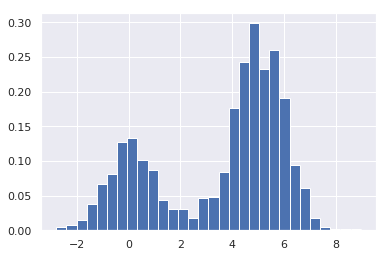

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_data(N, f=0.3, rseed=1):
  rand = np.random.RandomState(rseed)
  x = rand.randn(N)
  x[int(f * N):] += 5
  return x

x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

In [ ]:
# histogram is normed = area equa to 1
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

The issue is that depending on the bins the histograms may have different *qualitative* features. Consider this.

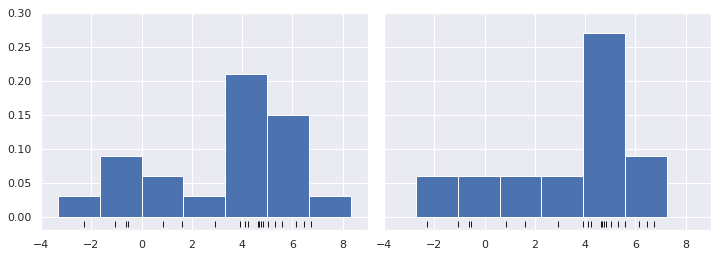

In [ ]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
  ax[i].hist(x, bins=bins + offset, density=True)
  ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
  


So it the underlying distribution bimodal or unimodal?
Please take a look at  [these](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28) animations of histograms tricky behavior.

---

**Sidenote** 

---

On the above picture we have used **a rug plot** -- a plot of data for a single quantitative variable, displayed as marks along an axis. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.
Rug plots are often used in combination with two-dimensional scatter plots by placing a rug plot of the x values of the data along the x-axis, and similarly for the y values. This is the origin of the term "rug plot", as these rug plots with perpendicular markers look like tassels along the edges of the rectangular "rug" of the scatter plot.

---

We can try to solve the problem with the ambiguity of the bin choice by the following idea.
You can rethink histogram as square blocks stacked on each other. Each block represents one point of data. If several datapoints are contained within one bin their blocks are placed one at the top of the other.

In [ ]:
#@title Varying bin size

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.optimize import minimize


Nbins = 10
x_min, x_max = 4.0, 10.0
y_min, y_max = 0.0, 1.0
x_ = np.array([93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,93.5,92.5,78,76,69,94.5,89.5,92.8,78,65.5,98,98.5,92.3,95.5,76,91,95,61.4,96,90]) * 0.1 - 1.0
y_ = np.array([0.0] * x_.shape[0])


fig = dict(
    layout = dict(
        width=600, height=600, autosize=False,
        showlegend = False,
        xaxis1 = {'domain': [0.0, 1.0], 'range': [x_min, x_max]},
        yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max]},
        title  = 'Binning',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus = [{'buttons': [{'args': [[k for k in range(Nbins)],
                                              {'frame': {'duration': 500.0, 'redraw': True},
                                               'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                     'label': 'Play',
                                     'method': 'animate'},
                                    {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                       'mode': 'immediate',
                                                       'transition': {'duration': 0}}
                                              ],
                                     'label': 'Pause',
                                     'method': 'animate'
                                     }
                                    ],
                        'direction': 'left',
                        'pad': {'r': 10, 't': 85},
                        'showactive': True,
                        'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 'prefix': 'Bins: ', 'visible': True, 'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                              'transition': {'duration': 0, 'easing': 'linear'}}
                                        ],
                               'label': k+1,
                               'method': 'animate'} for k in range(Nbins)
                    ]}]
    ),
    data = [
        {'type': 'histogram', 'name': 'f2', 'x': x_, 'opacity': 0.8, 
         'xbins': {'start': x_min, 'end': x_max, 'size': (x_max - x_min)},
         'histnorm': 'probability'},
        {'type': 'scatter', 'name': 's2', 'x': x_, 'y': y_, 'mode': 'markers' }
    ],
    frames=[
        {'name': str(k),
         'data': [
           {'type': 'histogram', 'name': 'f2', 'x': x_, 
            'xbins': {'start': x_min, 'end': x_max, 'size': (x_max - x_min)/(k+1)}, 'autobinx': False, 
            'histnorm': 'probability', 'opacity': 0.8},
           {'type': 'scatter', 'name': 's2', 'x': x_, 'y': y_, 'mode': 'markers' }
         ]} for k in range(Nbins) ]
)
#plot(fig, auto_open=False)
f = go.Figure(fig)
f.show()

In [ ]:
#@title Moving points


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.optimize import minimize


Nbins = 10
x_min, x_max = 4.0, 10.0
y_min, y_max = 0.0, 1.0
x_ = np.array([93.5,93,60.8,94.5,82,87.5,91.5,99.5,86,93.5,92.5,78,76,69,94.5,89.5,92.8,78,65.5,98,98.5,92.3,95.5,76,91,95,61.4,96,90]) * 0.1 - 1.0
y_ = np.array([0.0] * x_.shape[0])

fig = dict(
    layout = dict(
        width=600, height=600, autosize=False,
        showlegend = False,
        xaxis1 = {'domain': [0.0, 1.0], 'range': [x_min, x_max]},
        yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max]},
        title  = 'Binning',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus = [{'buttons': [{'args': [[k for k in range(Nbins)],
                                              {'frame': {'duration': 500.0, 'redraw': True},
                                               'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                     'label': 'Play',
                                     'method': 'animate'},
                                    {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                       'mode': 'immediate',
                                                       'transition': {'duration': 0}}
                                              ],
                                     'label': 'Pause',
                                     'method': 'animate'
                                     }
                                    ],
                        'direction': 'left',
                        'pad': {'r': 10, 't': 85},
                        'showactive': True,
                        'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 'prefix': 'Shift x 10: ', 'visible': True, 'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                              'transition': {'duration': 0, 'easing': 'linear'}}
                                        ],
                               'label': k+1,
                               'method': 'animate'} for k in range(Nbins)
                    ]}]
    ),
    data = [
        {'type': 'histogram', 'name': 'f2', 'x': x_, 'opacity': 0.8, 
         'xbins': {'start':x_min, 'end': x_max, 'size': 0.5}, 'autobinx': False,
         'histnorm': 'probability'},
        {'type': 'scatter', 'name': 's2', 'x': x_, 'y': y_, 'mode': 'markers' }
    ],
    frames=[
        {'name': str(k),
         'data': [
           {'type': 'histogram', 'name': 'f2', 'x': x_ + k * 0.1, 
            'xbins': {'start':x_min, 'end': x_max, 'size': 0.5}, 'autobinx': False, 
            'histnorm': 'probability', 'opacity': 0.8},
           {'type': 'scatter', 'name': 's2', 'x': x_ + k * 0.1, 'y': y_, 'mode': 'markers' }
         ]} for k in range(Nbins) ]
)
#plot(fig, auto_open=False)
f = go.Figure(fig)
f.show()

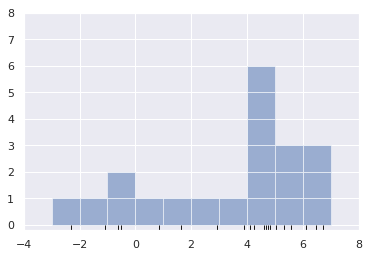

In [ ]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
  for i in range(count):
    ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
    ax.set_xlim(-4, 8)
    ax.set_ylim(-0.2, 8)

But what if we placed each block so its center is just below the point it represents.

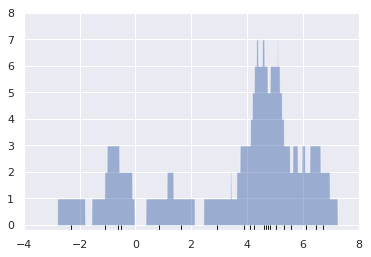

In [ ]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);

Analytically this can be seen as if we have placed a "square" function (kernel) centered at each point and then we have summed all the functions up.



In [ ]:
#@title ##Kernel
%%html

<svg width="110mm" height="120mm" version="1.1" viewBox="0 0 126.08 131.88" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".31884" fill-rule="evenodd" stroke="#000" stroke-opacity=".47826" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".31884" fill-rule="evenodd" stroke="#000" stroke-opacity=".47826" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mstart" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".58937" fill-rule="evenodd" stroke="#000" stroke-opacity=".58937" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".31884" fill-rule="evenodd" stroke="#000" stroke-opacity=".47826" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".31884" fill-rule="evenodd" stroke="#000" stroke-opacity=".47826" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".58937" fill-rule="evenodd" stroke="#000" stroke-opacity=".58937" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(7.3691 -24.397)">
  <path d="m-5.7923 76.52h122.27" fill-opacity=".31884" marker-end="url(#b)" stroke="#000" stroke-opacity=".47826" stroke-width=".59257"/>
  <circle cx="54.179" cy="76.528" r="1.4746" fill="#f00"/>
  <g fill="none">
   <path d="m-1.9399 75.823 39.138-0.0056 0.037908-23.245h31.645v23.259l39.007-0.01857" stroke="#f00" stroke-opacity=".86957" stroke-width=".736"/>
   <g stroke="#000">
    <g stroke-opacity=".4058"></g>
    <g stroke-opacity=".58454" stroke-width=".35">
     <path d="m1.2782 83.182v-58.095" fill="#000" fill-opacity=".31884" marker-end="url(#d)" stroke="#000" stroke-opacity=".47826" stroke-width=".59257"/>
    </g>
    <path d="m-5.8663 150.07h122.27" fill="#000" fill-opacity=".31884" marker-end="url(#a)" stroke-opacity=".47826" stroke-width=".59257"/>
    <path d="m1.1527 160.61v-67.937" fill="#000" fill-opacity=".31884" marker-end="url(#c)" stroke-opacity=".47826" stroke-width=".59257"/>
   </g>
  </g>
  <g fill-opacity=".23671">
   <path d="m45.586 128.4 0.03324 2.654 5.5004-4.5108-3.263 3e-3z"/>
   <path d="m45.599 133.25 0.0036 2.6564 9.8188-8.5515-0.01234-0.82483-1.9936 0.0261z"/>
   <path d="m45.595 137.86 0.0084 2.6528 9.814-8.639c0.01408-0.84761-0.0045-1.6091 0.0031-2.4591z"/>
  </g>
  <g fill="none">
   <path d="m-1.9312 149.53 25.942-9e-3 0.0095-23.814 31.627 0.0795 0.0083 23.732 51.323 0.0196" stroke="#f00" stroke-dasharray="1.458, 0.486" stroke-opacity=".86957" stroke-width=".486"/>
   <path d="m-1.9407 150.11 47.301 0.02255v-23.833l31.618 0.0536-0.01111 23.768 30.018 0.0118" stroke="#0000f9" stroke-dasharray="1.458, 0.486" stroke-opacity=".74879" stroke-width=".486"/>
   <g fill="none" stroke="#000" stroke-opacity=".84058" stroke-width=".7">
    <path d="m55.276 125.14c5.4773 0.0544 15.981-0.0715 22.748-0.0313"/>
    <path d="m-1.912 148.91 25.279-4e-3 0.0017-23.926"/>
    <path d="m77.257 148.87 29.727 0.0376"/>
    <path d="m77.601 149.22 0.06634-23.988"/>
    <path d="m45.3 125.47 0.003701-23.382h10.348l-0.03235 23.406"/>
    <path d="m23.013 125.04 22.628 0.10167"/>
   </g>
  </g>
  <g fill-opacity=".23671">
   <path d="m45.606 142.52-0.0032 2.654 9.8185-8.6378c1e-3 -0.8488 0.0026-1.6114 0.01021-2.4615z"/>
   <path d="m45.619 147.12-0.01869 2.6591 0.04817-8.5e-4 9.7929-8.6444c-0.02146-0.84998-0.0045-1.6091 0.0031-2.4591z"/>
   <path d="m47.856 149.77c1.2354 2e-3 2.2289 4e-3 2.8785 2e-3l4.6813-3.932c0.0053-0.83993 5e-3 -1.8247 0.0043-2.6771z"/>
   <path d="m55.415 149.77c9.77e-4 -0.78272 0.01035-1.9492 0.0056-2.2683-1.1257 1.0454-1.5347 1.3812-2.5582 2.2737 0.06083-5e-3 0.62707 5e-5 2.5526-5e-3z"/>
  </g>
  <circle cx="39.539" cy="150.06" r="1.4746" fill="#f00"/>
  <circle cx="61.45" cy="149.93" r="1.4582" fill="#00f"/>
  <g transform="matrix(1.5 0 0 -1.5 -395.64 1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$overlap$$\n" xml:space="preserve"><g fill-opacity=".74396" stroke="#000" stroke-width="0"><path d="m312.59 667.02v0.0838l-4e-3 0.0398-0.0192 0.0795-0.0192 0.0707-0.0266 0.0707-0.0176 0.0309-0.0133 0.0309-0.0176 0.0309-0.0443 0.0529-0.0176 0.0265-0.0486 0.0486-0.0529 0.0443-0.0265 0.0176-0.0309 0.0176-0.0265 0.0176-0.031 0.0133-0.0309 0.0133-0.0353 0.0133-0.0309 0.01-0.0707 0.0192-0.10598 0.0108h-0.0353c-0.59225 0-1.1801-0.6232-1.1801-1.2464 0-0.43315 0.2917-0.74251 0.70273-0.74251l4e-3 0.0972c-0.19005 0-0.38452 0.13702-0.38452 0.47734 0 0.21657 0.11497 0.68948 0.25635 0.91488 0.22098 0.3359 0.47291 0.4022 0.59666 0.4022 0.25636 0 0.38893-0.21216 0.38893-0.47291 0-0.17237-0.0884-0.63201-0.25633-0.9193-0.15471-0.25194-0.39779-0.40221-0.60109-0.40221l-4e-3 -0.0972c0.58783 0 1.1801 0.60551 1.1801 1.2463z"/><path d="m314.72 667.45v0.0685l-4e-3 0.01v0.0272l-7e-3 0.0352-7e-3 0.0263-4e-3 0.0133-0.01 0.0133-7e-3 0.0263-0.01 0.01-4e-3 0.01-0.0192 0.0192-4e-3 0.01-0.01 0.01-0.01 4e-3 -0.0132 0.0132-0.0288 0.0108h-0.01l-0.01 4e-3h-0.01l-4e-3 4e-3h-0.0288c-0.11053 0-0.21214-0.11485-0.21214-0.21214 0-0.053 0.0176-0.0795 0.0707-0.12818 0.0884-0.0884 0.14584-0.20332 0.14584-0.36242 0-0.18563-0.26517-1.1889-0.78227-1.1889-0.22543 0-0.32707 0.15468-0.32707 0.38008 0 0.24751 0.11929 0.56572 0.25635 0.93256 0.0309 0.0752 0.053 0.13702 0.053 0.22098 0 0.19448-0.14143 0.35801-0.36241 0.35801-0.41545 0-0.58342-0.63644-0.58342-0.67621 0-0.0442 0.0442-0.0442 0.0531-0.0442 0.0442 0 0.0486 0.01 0.0707 0.0795 0.12818 0.44197 0.31822 0.54363 0.4464 0.54363 0.0353 0 0.11054 0 0.11054-0.14143 0-0.10611-0.0441-0.22541-0.0751-0.30498-0.19446-0.50825-0.25193-0.71157-0.25193-0.90162 0-0.47292 0.38894-0.54362 0.59224-0.54362 0.73811 0 0.99003 1.4541 0.99003 1.6795z"/><path d="m315.78 666.84h0.14575l0.0222 4e-3h0.0443l0.0222 4e-3h0.0222l0.0442 4e-3 0.0486 4e-3 0.14587 0.0287 0.0442 0.01 0.0265 0.01 0.022 4e-3 0.0443 0.0192 0.0222 4e-3 0.0176 0.01c0.30937 0.13258 0.33148 0.39336 0.33148 0.45523 0 0.19004-0.16795 0.37126-0.47291 0.37126v-0.0972c0.20772 0 0.32706-0.12817 0.32706-0.27402 0-0.45966-0.70275-0.45966-0.88394-0.45966h-0.18121c0.17236 0.66738 0.62759 0.73368 0.73809 0.73368v0.0972c-0.48618 0-1.1536-0.42429-1.1536-1.1933 0-0.4508 0.26077-0.79554 0.6939-0.79554 0.6276 0 0.99886 0.46406 0.99886 0.5171 0 0.0265-0.0265 0.0575-0.053 0.0575-0.0222 0-0.0309-0.01-0.0574-0.0441-0.34915-0.43313-0.8265-0.43313-0.87953-0.43313-0.34474 0-0.38452 0.36684-0.38452 0.50827 0 0.0531 4e-3 0.19005 0.0708 0.45965z"/><path d="m317.39 666.08v-0.01l-4e-3 -4e-3v-0.0132l-4e-3 -0.0132-4e-3 -0.0176v-0.0133l-4e-3 -0.0132-7e-3 -0.0266v-0.0132l-4e-3 -0.01v-0.0132l-4e-3 -4e-3v-0.0204l-4e-3 -4e-3v-0.0108c0-0.0795 0.0619-0.11928 0.12818-0.11928 0.0531 0 0.1326 0.0353 0.16355 0.12375 0.01 0.0176 0.1591 0.61436 0.17679 0.69389 0.0353 0.14587 0.11485 0.45082 0.14141 0.57015 0.0176 0.0575 0.14144 0.26519 0.2431 0.358 0.0353 0.0309 0.16352 0.14585 0.35357 0.14585 0.11497 0 0.18121-0.0531 0.18563-0.0531-0.13258-0.0222-0.22983-0.12816-0.22983-0.23866 0-0.0708 0.0486-0.15469 0.16796-0.15469 0.11928 0 0.24308 0.10156 0.24308 0.25636 0 0.15467-0.14143 0.28728-0.36684 0.28728-0.28728 0-0.48175-0.21656-0.56131-0.33592-0.0353 0.19447-0.19446 0.33592-0.40219 0.33592-0.20331 0-0.28729-0.17237-0.32706-0.25193-0.0795-0.14585-0.13702-0.41104-0.13702-0.42428 0-0.0442 0.0441-0.0442 0.0531-0.0442 0.0441 0 0.0486 4e-3 0.0751 0.10156 0.0751 0.30938 0.16354 0.52152 0.32264 0.52152 0.0751 0 0.13702-0.0352 0.13702-0.19888 0-0.0928-0.0133-0.14142-0.0707-0.37125z"/><path d="m320.26 668.81v7e-3l-4e-3 4e-3v7e-3h-4e-3v4e-3l-4e-3 4e-3h-4e-3v4e-3h-4e-3v4e-3h-7e-3v4e-3h-0.0216c-0.10167 0-0.4243-0.0353-0.53922-0.0398-0.0353-4e-3 -0.0838-0.01-0.0838-0.0928 0-0.0486 0.0442-0.0486 0.11042-0.0486 0.21214 0 0.21656-0.0398 0.21656-0.0751l-0.0133-0.0884-0.55247-2.1966c-0.0133-0.0486-0.0265-0.0795-0.0265-0.15026 0-0.24752 0.19448-0.40219 0.40222-0.40219 0.14584 0 0.25633 0.0884 0.33147 0.24749 0.0795 0.16355 0.1326 0.41988 0.1326 0.42872 0 0.0442-0.0398 0.0442-0.053 0.0442-0.0442 0-0.0486-0.0176-0.0619-0.0795-0.0751-0.28732-0.1591-0.54364-0.3359-0.54364-0.1326 0-0.1326 0.14143-0.1326 0.20331 0 0.10167 4e-3 0.12374 0.0265 0.20772z"/><path d="m322.16 667.47-0.01 0.0176-0.01 0.0133-0.01 0.0176-4e-3 0.0133-0.01 0.0132-0.0133 0.0133-0.01 0.0133-0.01 0.0132-0.01 0.0133-0.01 0.0132-0.0133 0.01-0.01 0.0133-0.0133 0.01-0.0229 0.0229-0.0665 0.0479-0.0133 4e-3 -0.0133 0.01-0.0176 4e-3 -0.0132 4e-3 -0.0176 4e-3 -0.0133 4e-3 -0.0352 7e-3h-0.0176l-0.0176 4e-3h-0.0352c-0.51712 0-1.0608-0.64528-1.0608-1.2861 0-0.41103 0.24309-0.70273 0.5834-0.70273l0.01 0.0972c-0.221 0-0.27845 0.24308-0.27845 0.41103 0 0.22099 0.13701 0.76021 0.23866 0.96351 0.13702 0.25634 0.3359 0.41988 0.51269 0.41988 0.28729 0 0.34915-0.358 0.34915-0.38453 0-0.0265-0.01-0.053-0.0133-0.0751l-0.22099-0.86186c-0.0222-0.0795-0.0222-0.0884-0.0884-0.16352-0.19446-0.23868-0.37566-0.3094-0.49941-0.3094l-0.01-0.0972c0.0884 0 0.30938 0.0176 0.57455 0.33148 0.0353-0.18565 0.19006-0.33148 0.4022-0.33148 0.15469 0 0.25635 0.10168 0.32707 0.24308 0.0707 0.15911 0.12817 0.42429 0.12817 0.43314 0 0.0441-0.0399 0.0441-0.0487 0.0441-0.0486 0-0.0486-0.0176-0.0662-0.0795-0.0707-0.28728-0.15028-0.54362-0.3315-0.54362-0.11928 0-0.13259 0.11497-0.13259 0.20331 0 0.0972 0.01 0.12816 0.0574 0.32263 0.0486 0.18563 0.0575 0.22983 0.0972 0.39335l0.15911 0.61877c0.0309 0.11928 0.0309 0.12817 0.0309 0.14584 0 0.0751-0.053 0.11941-0.12818 0.11941-0.1061 0-0.17235-0.0973-0.18562-0.19448z"/><path d="m323.03 665.28v-0.0132l-4e-3 -0.0133-4e-3 -0.0132-4e-3 -0.0133v-0.01l-4e-3 -0.0133-4e-3 -0.01v-0.01l-7e-3 -0.0192-4e-3 -4e-3 -4e-3 -0.01-4e-3 -4e-3 -4e-3 -0.01-7e-3 -7e-3 -0.01-4e-3 -4e-3 -4e-3 -0.01-4e-3 -4e-3 -4e-3 -0.01-4e-3h-0.01l-0.01-4e-3h-0.0132l-0.01-4e-3h-0.0301l-0.01-4e-3h-0.0684c-0.053 0-0.0972 0-0.0972-0.0839 0-0.0353 0.0176-0.0531 0.0575-0.0531 0.11497 0 0.24309 0.0133 0.36684 0.0133 0.14585 0 0.29612-0.0133 0.43756-0.0133 0.0222 0 0.0795 0 0.0795 0.0884 0 0.0486-0.0442 0.0486-0.10611 0.0486-0.22098 0-0.22098 0.0309-0.22098 0.0707 0 0.053 0.18563 0.76903 0.21656 0.87953 0.0575-0.12818 0.18122-0.28287 0.40661-0.28287l-4e-3 0.0972c-0.2917 0-0.34915 0.36242-0.34915 0.38894 0 0.01 0 0.0176 0.0132 0.0707l0.21657 0.86185c0.0309 0.11928 0.15027 0.24307 0.22983 0.30937 0.15468 0.1326 0.27843 0.16355 0.35357 0.16355 0.1768 0 0.28286-0.15471 0.28286-0.41104 0-0.26078-0.14584-0.76462-0.2254-0.93256-0.15028-0.30497-0.358-0.45083-0.52153-0.45083l4e-3 -0.0973c0.50827 0 1.0607 0.64085 1.0607 1.2861 0 0.41547-0.25194 0.70274-0.58782 0.70274-0.21657 0-0.42872-0.15911-0.57456-0.32706-0.0442 0.23426-0.23426 0.32706-0.39779 0.32706-0.2033 0-0.28728-0.17236-0.32706-0.25191-0.0795-0.14586-0.13699-0.41105-0.13699-0.4243 0-0.0442 0.0442-0.0442 0.053-0.0442 0.0442 0 0.0486 4e-3 0.0751 0.10155 0.0751 0.30937 0.16354 0.52152 0.32266 0.52152 0.0751 0 0.13701-0.0353 0.13701-0.19888 0-0.10156-0.0133-0.15027-0.0309-0.22542z"/></g><g stroke="#000" stroke-miterlimit="10.433"><g id="content" transform="matrix(1.1238 0 0 -1.1238 -208.15 1014.2)" fill-opacity=".74396" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Kernel}$$\n" xml:space="preserve"><path d="m474.09 264.31 0.66966-0.64348c0.0299-0.0299 0.2282-0.22073 0.53124-0.22446v-0.11598c-0.0973 0.015-0.217 0.015-0.318 0.015-0.13468 0-0.34793 0-0.47138-0.015v0.11598c0.1459 4e-3 0.16835 0.0898 0.16835 0.12345 0 0.0599-0.0336 0.0973-0.0673 0.12346l-1.1672 1.1111v-1.1822c0-0.13468 7e-3 -0.17583 0.29555-0.17583h0.0898v-0.11598c-0.13094 0.015-0.40778 0.015-0.54995 0.015-0.13842 0-0.419 0-0.54994-0.015v0.11598h0.0898c0.28806 0 0.29554 0.0412 0.29554 0.17583v1.9566c0 0.13468-7e-3 0.17584-0.29554 0.17584h-0.0898v0.11597c0.13094-0.0113 0.40778-0.0113 0.54994-0.0113 0.13842 0 0.41901 0 0.54995 0.0113v-0.11597h-0.0898c-0.28806 0-0.29555-0.0412-0.29555-0.17584v-0.64721l0.43397-0.41153 0.67341 0.99888c0.0224 0.0336 0.0599 0.0785 0.0599 0.12346 0 0.11224-0.14591 0.11224-0.22073 0.11224v0.11597c0.13094-0.0113 0.38908-0.0113 0.53124-0.0113 0.13093 0 0.2731 4e-3 0.43023 0.0113v-0.11597c-0.20202 0-0.28058-0.015-0.39282-0.17958z"/><path d="m475.91 265 4e-3 -0.0748c0.0224-0.55369 0.33296-0.64722 0.46016-0.64722 0.38534 0 0.42275 0.50131 0.42275 0.64722h-0.88291l-4e-3 0.0748h1.04c0.0823 0 0.0935 0 0.0935-0.0748 0-0.37037-0.20202-0.72952-0.66965-0.72952-0.43023 0-0.77441 0.38159-0.77441 0.84924 0 0.49756 0.39281 0.85671 0.8193 0.85671 0.45642 0 0.62476-0.41153 0.62476-0.48261 0-0.0374-0.0299-0.0449-0.0486-0.0449-0.0337 0-0.0412 0.0224-0.0486 0.0524-0.13094 0.38158-0.46764 0.38158-0.50506 0.38158-0.18705 0-0.3367-0.11223-0.419-0.24691-0.11223-0.17957-0.11223-0.42648-0.11223-0.56117z"/><path d="m477.77 264.63v-0.40779l-0.51627 0.0412v0.11598c0.25814 0 0.28807 0.0262 0.28807 0.20575v0.99888c0 0.16461-0.0412 0.16461-0.28807 0.16461v0.11597c0.14217-4e-3 0.31799-0.0113 0.42275-0.0113 0.14964 0 0.32547 0 0.47512 0.0113v-0.11597h-0.0785c-0.27684 0-0.28433-0.0412-0.28433-0.17583v-0.56865c0-0.37037 0.15713-0.69959 0.44145-0.69959 0.0262 0 0.0336 0 0.0412 4e-3 -0.0113 4e-3 -0.0861 0.0486-0.0861 0.14216 0 0.10475 0.0785 0.16087 0.16087 0.16087 0.0673 0 0.16086-0.0449 0.16086-0.16461 0-0.11597-0.11598-0.22447-0.27684-0.22447-0.27311 0-0.40778 0.24692-0.46016 0.40779z"/><path d="m479.02 264.58v0.99887c0 0.16462-0.0412 0.16462-0.2918 0.16462v0.11597c0.13094-4e-3 0.32173-0.0113 0.419-0.0113 0.0973 0 0.29181 7e-3 0.419 0.0113v-0.11597c-0.25064 0-0.2918 0-0.2918-0.16462v-0.68462c0-0.38907 0.26562-0.59484 0.50505-0.59484 0.2357 0 0.27684 0.19828 0.27684 0.41153v0.86793c0 0.16462-0.0412 0.16462-0.2918 0.16462v0.11597c0.13094-4e-3 0.32173-0.0113 0.42274-0.0113 0.0973 0 0.29181 7e-3 0.41527 0.0113v-0.11597c-0.19454 0-0.28433 0-0.28807-0.11224v-0.70707c0-0.32174 0-0.43772-0.11598-0.56865-0.0523-0.0636-0.17582-0.13843-0.39281-0.13843-0.2731 0-0.44894 0.16087-0.55368 0.38909v-0.38909l-0.52376 0.0412v0.11598c0.26188 0 0.2918 0.0262 0.2918 0.20575z"/><path d="m481.09 265 4e-3 -0.0748c0.0224-0.55369 0.33671-0.64722 0.46391-0.64722 0.38159 0 0.419 0.50131 0.419 0.64722h-0.88291l-4e-3 0.0748h1.04c0.0823 0 0.0935 0 0.0935-0.0748 0-0.37037-0.20202-0.72952-0.66592-0.72952-0.43397 0-0.77815 0.38159-0.77815 0.84924 0 0.49756 0.39281 0.85671 0.82304 0.85671 0.45268 0 0.62103-0.41153 0.62103-0.48261 0-0.0374-0.0299-0.0449-0.0486-0.0449-0.0336 0-0.0412 0.0224-0.0486 0.0524-0.13094 0.38158-0.4639 0.38158-0.50131 0.38158-0.18706 0-0.3367-0.11223-0.42275-0.24691-0.11223-0.17957-0.11223-0.42648-0.11223-0.56117z"/><path d="m483 263.29-0.53872 0.0374v0.11598c0.26188 0 0.29181 0.0262 0.29181 0.20951v1.9342c0 0.16461-0.0412 0.16461-0.29181 0.16461v0.11597c0.12346-4e-3 0.32174-0.0113 0.41526-0.0113 0.0935 0 0.2731 7e-3 0.41152 0.0113v-0.11597c-0.24691 0-0.28806 0-0.28806-0.16461z"/></g><path d="m311.7 705.24 14.593 8.7932" fill="none" marker-start="url(#e)" stroke-opacity=".58937" stroke-width=".44333"/></g><g transform="matrix(.46672 0 0 .46672 197.78 362.67)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.2286" ns0:preamble="default_packages.tex" ns0:text="$$x$$\n" xml:space="preserve"><path d="m306.11 698.17v0.03l0.03 0.09 0.02 0.08 0.01 0.05 0.02 0.04 0.01 0.05 0.02 0.05 0.02 0.04 0.04 0.1 0.03 0.05 0.02 0.05 0.09 0.15 0.04 0.04 0.03 0.05 0.16 0.16 0.1 0.06 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.09 0.03h0.03l0.03 0.01h0.1c0.04 0 0.28 0 0.49-0.13-0.28-0.05-0.48-0.3-0.48-0.53 0-0.16 0.12-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.51-0.59 0.65-0.92 0.65-0.58 0-0.93-0.53-1.05-0.75-0.25 0.65-0.79 0.75-1.08 0.75-1.04 0-1.6-1.28-1.6-1.53 0-0.1 0.1-0.1 0.11-0.1 0.09 0 0.12 0.02 0.14 0.11 0.33 1.05 0.99 1.3 1.33 1.3 0.19 0 0.54-0.09 0.54-0.66 0-0.31-0.17-0.98-0.54-2.37-0.16-0.61-0.51-1.03-0.95-1.03-0.06 0-0.29 0-0.49 0.13 0.24 0.05 0.46 0.26 0.46 0.54 0 0.26-0.22 0.34-0.37 0.34-0.29 0-0.54-0.26-0.54-0.57 0-0.46 0.5-0.66 0.93-0.66 0.66 0 1.02 0.7 1.05 0.76 0.12-0.37 0.48-0.76 1.08-0.76 1.02 0 1.59 1.28 1.59 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.04-0.13-0.11-0.33-1.06-1-1.3-1.32-1.3-0.39 0-0.55 0.32-0.55 0.65 0 0.22 0.06 0.44 0.17 0.88z" fill-opacity=".89372" stroke-width="0"/></g><g transform="matrix(0 .23297 -.23297 0 321.2 646.49)" fill-opacity=".89372" stroke-width="1.1261"><g transform="matrix(1.5,0,0,1.5,-158.95,-790.54)" fill-opacity=".89372" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{pdf estimate}$$\n" xml:space="preserve"><path d="m280.19 698.91v0.65l-1.43-0.11v-0.31c0.7 0 0.77-0.06 0.77-0.49v-4.65c0-0.45-0.11-0.45-0.77-0.45v-0.31c0.33 0.01 0.85 0.03 1.11 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.76l0.14 0.13c-0.14 0.2-0.14 0.21-0.14 0.41v2.22c0.29 0.5 0.78 0.79 1.29 0.79 0.73 0 1.33-0.87 1.33-1.99 0-1.21-0.69-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.7 1.23-0.7 1.18 0 2.22 0.97 2.22 2.26 0 1.26-0.97 2.24-2.08 2.24-0.78 0-1.2-0.44-1.4-0.65z"/><path d="m288.08 695.72v-0.66l1.47 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.55v6.03l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.35-0.72 0.61-1.26 0.61l0.04-0.22c0.35 0 0.77-0.15 1.08-0.59 0.11-0.17 0.11-0.19 0.11-0.37v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.26-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.39 0 0.36 0.02 0.96 0.31 1.41 0.21 0.3 0.58 0.63 1.12 0.63l-0.04 0.22c-1.17 0-2.22-0.97-2.22-2.25 0-1.27 0.98-2.25 2.11-2.25 0.64 0 1.09 0.34 1.34 0.66z"/><path d="m291.57 699.45v1.15c0 0.88 0.48 1.36 0.92 1.36 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.23 0.16-0.43 0.43-0.43 0.29 0 0.44 0.2 0.44 0.44 0 0.37-0.37 0.69-0.9 0.69-0.7 0-1.55-0.52-1.55-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.19h1.14v0.31z"/><path d="m297.29 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m302.69 697.1 0.02-0.01h0.03l0.03-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.08-0.02 0.05-0.02 0.04-0.01 0.04-0.02 0.05-0.02 0.04-0.02 0.05-0.02 0.04-0.03 0.04-0.02 0.04-0.03 0.05-0.03 0.04-0.03 0.03-0.04 0.04-0.04 0.09-0.12 0.02-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06v-0.03l0.01-0.03v-0.06l0.01-0.03v-0.04c0-0.5-0.35-0.9-1.13-0.9-0.84 0-1.2 0.56-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.42 0.89-0.43 1.1-0.43 1.15 0 1.6 0.67 1.6 1.38 0 0.53-0.29 0.83-0.41 0.95-0.33 0.31-0.72 0.39-1.14 0.47-0.56 0.11-1.23 0.24-1.23 0.82 0 0.34 0.26 0.75 1.12 0.75 1.1 0 1.15-0.89 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.66-1.6-1.22 0-0.35 0.16-0.63 0.43-0.85 0.32-0.25 0.6-0.31 1.32-0.45z"/><path d="m306.27 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m310.18 699.56-1.39-0.11v-0.31c0.65 0 0.73-0.06 0.73-0.54v-2.68c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m310.22 701.29v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.03 0.01-0.02 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m312.28 698.59v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.76 0-0.77 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.59-1.45-0.97-0.14 0.86-0.87 0.97-1.32 0.97-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m322.81 695.92v-0.03l0.02-0.08v-0.03l0.01-0.04 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.04 0.01-0.03 0.02-0.03 0.02-0.04 0.06-0.09 0.03-0.03 0.02-0.03 0.03-0.03 0.03-0.02 0.03-0.03 0.12-0.08 0.04-0.01 0.03-0.02 0.16-0.04h0.09c0.21 0 0.81 0.14 0.81 0.94v0.56h-0.25v-0.56c0-0.57-0.24-0.63-0.35-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.12 0-0.3 0.19-0.47 0.45-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.5 0.46 0.26 0.34 0.75 0.45 1.07 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.74-0.34-0.99-0.86-0.99-1.3 0-0.8 0.96-1.05 1.59-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m326.19 699.14h1.43v0.31h-1.43v1.83h-0.24c-0.02-0.81-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m329.45 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/></g></g><g transform="matrix(0 .23297 -.23297 0 321.19 599.54)" fill-opacity=".89372" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.1261"><g transform="matrix(1.5,0,0,1.5,-158.95,-790.54)" fill-opacity=".89372" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{pdf estimate}$$\n" xml:space="preserve"><path d="m280.19 698.91v0.65l-1.43-0.11v-0.31c0.7 0 0.77-0.06 0.77-0.49v-4.65c0-0.45-0.11-0.45-0.77-0.45v-0.31c0.33 0.01 0.85 0.03 1.11 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.76l0.14 0.13c-0.14 0.2-0.14 0.21-0.14 0.41v2.22c0.29 0.5 0.78 0.79 1.29 0.79 0.73 0 1.33-0.87 1.33-1.99 0-1.21-0.69-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.7 1.23-0.7 1.18 0 2.22 0.97 2.22 2.26 0 1.26-0.97 2.24-2.08 2.24-0.78 0-1.2-0.44-1.4-0.65z"/><path d="m288.08 695.72v-0.66l1.47 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.55v6.03l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.35-0.72 0.61-1.26 0.61l0.04-0.22c0.35 0 0.77-0.15 1.08-0.59 0.11-0.17 0.11-0.19 0.11-0.37v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.26-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.39 0 0.36 0.02 0.96 0.31 1.41 0.21 0.3 0.58 0.63 1.12 0.63l-0.04 0.22c-1.17 0-2.22-0.97-2.22-2.25 0-1.27 0.98-2.25 2.11-2.25 0.64 0 1.09 0.34 1.34 0.66z"/><path d="m291.57 699.45v1.15c0 0.88 0.48 1.36 0.92 1.36 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.23 0.16-0.43 0.43-0.43 0.29 0 0.44 0.2 0.44 0.44 0 0.37-0.37 0.69-0.9 0.69-0.7 0-1.55-0.52-1.55-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.19h1.14v0.31z"/><path d="m297.29 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m302.69 697.1 0.02-0.01h0.03l0.03-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.08-0.02 0.05-0.02 0.04-0.01 0.04-0.02 0.05-0.02 0.04-0.02 0.05-0.02 0.04-0.03 0.04-0.02 0.04-0.03 0.05-0.03 0.04-0.03 0.03-0.04 0.04-0.04 0.09-0.12 0.02-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06v-0.03l0.01-0.03v-0.06l0.01-0.03v-0.04c0-0.5-0.35-0.9-1.13-0.9-0.84 0-1.2 0.56-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.42 0.89-0.43 1.1-0.43 1.15 0 1.6 0.67 1.6 1.38 0 0.53-0.29 0.83-0.41 0.95-0.33 0.31-0.72 0.39-1.14 0.47-0.56 0.11-1.23 0.24-1.23 0.82 0 0.34 0.26 0.75 1.12 0.75 1.1 0 1.15-0.89 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.66-1.6-1.22 0-0.35 0.16-0.63 0.43-0.85 0.32-0.25 0.6-0.31 1.32-0.45z"/><path d="m306.27 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m310.18 699.56-1.39-0.11v-0.31c0.65 0 0.73-0.06 0.73-0.54v-2.68c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m310.22 701.29v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.03 0.01-0.02 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m312.28 698.59v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.76 0-0.77 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.59-1.45-0.97-0.14 0.86-0.87 0.97-1.32 0.97-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m322.81 695.92v-0.03l0.02-0.08v-0.03l0.01-0.04 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.04 0.01-0.03 0.02-0.03 0.02-0.04 0.06-0.09 0.03-0.03 0.02-0.03 0.03-0.03 0.03-0.02 0.03-0.03 0.12-0.08 0.04-0.01 0.03-0.02 0.16-0.04h0.09c0.21 0 0.81 0.14 0.81 0.94v0.56h-0.25v-0.56c0-0.57-0.24-0.63-0.35-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.12 0-0.3 0.19-0.47 0.45-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.5 0.46 0.26 0.34 0.75 0.45 1.07 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.74-0.34-0.99-0.86-0.99-1.3 0-0.8 0.96-1.05 1.59-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m326.19 699.14h1.43v0.31h-1.43v1.83h-0.24c-0.02-0.81-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m329.45 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/></g></g><g transform="matrix(.46672 0 0 .46672 198.22 313.55)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="1.2286" ns0:preamble="default_packages.tex" ns0:text="$$x$$\n" xml:space="preserve"><path d="m306.11 698.17v0.03l0.03 0.09 0.02 0.08 0.01 0.05 0.02 0.04 0.01 0.05 0.02 0.05 0.02 0.04 0.04 0.1 0.03 0.05 0.02 0.05 0.09 0.15 0.04 0.04 0.03 0.05 0.16 0.16 0.1 0.06 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.09 0.03h0.03l0.03 0.01h0.1c0.04 0 0.28 0 0.49-0.13-0.28-0.05-0.48-0.3-0.48-0.53 0-0.16 0.12-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.51-0.59 0.65-0.92 0.65-0.58 0-0.93-0.53-1.05-0.75-0.25 0.65-0.79 0.75-1.08 0.75-1.04 0-1.6-1.28-1.6-1.53 0-0.1 0.1-0.1 0.11-0.1 0.09 0 0.12 0.02 0.14 0.11 0.33 1.05 0.99 1.3 1.33 1.3 0.19 0 0.54-0.09 0.54-0.66 0-0.31-0.17-0.98-0.54-2.37-0.16-0.61-0.51-1.03-0.95-1.03-0.06 0-0.29 0-0.49 0.13 0.24 0.05 0.46 0.26 0.46 0.54 0 0.26-0.22 0.34-0.37 0.34-0.29 0-0.54-0.26-0.54-0.57 0-0.46 0.5-0.66 0.93-0.66 0.66 0 1.02 0.7 1.05 0.76 0.12-0.37 0.48-0.76 1.08-0.76 1.02 0 1.59 1.28 1.59 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.04-0.13-0.11-0.33-1.06-1-1.3-1.32-1.3-0.39 0-0.55 0.32-0.55 0.65 0 0.22 0.06 0.44 0.17 0.88z" fill-opacity=".89372" stroke-width="0"/></g><path d="m299.53 654.71 14.593 8.7932" fill="none" marker-start="url(#Arrow1Mstart)" stroke-opacity=".58937" stroke-width=".44333"/></g>
 </g>
</svg>



This type of kernel is called top hat as it recalls a flat-crowned hat (aka *cylinder* - another term that is both a hat and a math object). The length of the kernel function has not have to be equal to the height.

In [ ]:
#@title ##Top hat
%%html
<svg width="150mm" height="65mm" version="1.1" viewBox="0 0 173.01 80.496" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".37198" fill-rule="evenodd" stroke="#000" stroke-opacity=".37198" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".61836" fill-rule="evenodd" stroke="#f00" stroke-opacity=".61836" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".61836" fill-rule="evenodd" stroke="#f00" stroke-opacity=".61836" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-22 -.6002)">
  <image x="22" y="25.989" width="55.108" height="55.108" preserveAspectRatio="none" xlink:href="data:image/jpeg;base64,/9j/4Q61RXhpZgAASUkqAAgAAAAQAAABAwABAAAAgAcAAAEBAwABAAAAgAcAAAIBAwADAAAAzgAA AAMBAwABAAAAAQAAAAYBAwABAAAAAgAAAA8BAgAGAAAA1AAAABABAgAVAAAA2gAAABIBAwABAAAA AQAAABUBAwABAAAAAwAAABoBBQABAAAA7wAAABsBBQABAAAA9wAAABwBAwABAAAAAQAAACgBAwAB AAAAAgAAADEBAgAeAAAA/wAAADIBAgAUAAAAHQEAAGmHBAABAAAANAEAANgDAAAIAAgACABDYW5v bgBDYW5vbiBFT1MgNUQgTWFyayBJSQDAxi0AECcAAMDGLQAQJwAAQWRvYmUgUGhvdG9zaG9wIENT NSBNYWNpbnRvc2gAMjAxNTowMzowNSAxNDozNzo0MQAAAAAYADIBAgAUAAAAWgIAAJqCBQABAAAA bgIAAJ2CBQABAAAAdgIAACKIAwABAAAAAQAAACeIAwABAAAAZAAAAACQBwAEAAAAMDIyMAOQAgAU AAAAfgIAAASQAgAUAAAAkgIAAAGSCgABAAAApgIAAAKSBQABAAAArgIAAASSCgABAAAAtgIAAAaS BQABAAAAvgIAAAeSAwABAAAABQAAAAmSAwABAAAAEAAAAAqSBQABAAAAxgIAAIaSBwAIAQAAzgIA AAGgAwABAAAAAQAAAAKgBAABAAAAgAcAAAOgBAABAAAAgAcAABCiAwABAAAAAgAAAACjBwABAAAA AwAAAAGjBwABAAAAAQAAAAKkAwABAAAAAQAAAAOkAwABAAAAAAAAAAAAAAAyMDE1OjAyOjE5IDEz OjQ0OjQzAAEAAAB9AAAAEAAAAAEAAAAyMDE1OjAyOjE5IDEzOjQ0OjQzADIwMTU6MDI6MTkgMTM6 NDQ6NDMAAAAHAAAAAQAAAAgAAAABAAAAAAABAAAAAAAAAAEAAAAeAAAAAQAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABgADAQMAAQAAAAYAAAAaAQUAAQAAACYEAAAbAQUA AQAAAC4EAAAoAQMAAQAAAAIAAAABAgQAAQAAADYEAAACAgQAAQAAAHcKAAAAAAAASAAAAAEAAABI AAAAAQAAAP/Y/+0ADEFkb2JlX0NNAAH/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsK CxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0O DRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM DAz/wAARCACgAKADASIAAhEBAxEB/90ABAAK/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcI CQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCES MQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl 8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQE AwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKD ByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dn d4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklKSQsrKx8THsysl4qopaX2WO4AC5PM/wAYdcln TsQ2Ec2ZDxWB5+nV6zv891KSnsUl5zlfXH6wWiW9RxMVnY00Fx/zsmy1jv8ANWdkdc65eP0n1iuZ HIZVXX/54ZW7/pJKfV0l4vf1DOaJ/wCc2W46yBdc0/JrHrOs6z1ZhivqeZa0dxlXDT/t1qSn3lJe E0db6w72u6pmVjwdl5EfLa9yv1dX60yDX1+4T+a6+x5/zbWvSU+zpLyij6xfWmsadda8ADltT5nz sx9yv4v1w+sVer8/GyP5NtIHHP8AMPo/6lJT6QkuPw/r64NnPxmloJDrcd3/AKJu/wDehdXi5WPl 41eVjPFlFzQ+t44LTqOUlJUkkklKSSSSU//Q9VSSSSUpJJJJTzv1+bb/AM2Ml9RINbqnuAMS31GN I/6W5eLOzbO7fuJHK9965ijL6Nm45E76X7R/KA3M/wCmF8+3t22WNj6LiPDgwkpKMkO8R+KmLWRq PvAVVhIUy47TodPuRSlsvpHeD8/yIf2ir978qq2kygkpIdFuTX2Kl9pZ2JWY06ojOdUkt03tng/g onLcNW/fKARA0CikpsMycixwZugHSBxqvcvqNjHG+qnTqySd1brdef0r35H/AKNXhFH0we3P3L6L 6Zj/AGXpuJjRHoUV1x/UY1n8EFNpJJJJCkkkklP/0fVUkkklKSSSSUxewPY5juHAg/Ar546kzZlW giDJBB8fzl9Er5/+sVPodYzKogMuuYB/VseyP+ikpzGBTdoJ5UGEDxUi4QZ1lFLXsGv5UEothJKC UkLhGrBhBaj1eeqCWTvvUCVNx5UDyipt9KoORnUUN1N1jKwP67hX/wB+X0cvAfqbV6v1l6YzkHJq P+a4Wf8AfF78gpSSSSSFJJJJKf/S9VSSSSUpJJJJSl4X9dGBn1kzx432E/M7/wDv690Xh/17BH1p 6i0jQXA/exhSU823v+IUi32yotjhTjuEVNe0RqgFHsj+BQSgpYco9fkdUAI1f4JKZk+CgVI+PKiU kvUf4u69/wBbenNH773f5tVr/wDvq9yXiH+LUtH1wwJ5/TAeX6G5e3pIUkkkkpSSSSSn/9P1VJJJ JSlS6v1bD6P0+3qGY4iqoD2t1c5zjtrqrb/pLHnY1XV51/jaz3NPTentd7T6uTY3xLQ2ij/z9kJK eW+s3+ML6x9SvOPi5D8CqZNeM4sLQfo1/aG7L7X7f5x/6Ov/AIFYF9tllOO+1xfaax6jnGXOMnVz ifcqxeJc4n3EkuPjKRulrB2AgFFSmnWOUUH2zKA1wRgdCkpBbyUAo9vPkgFJSgj1tQByj1mPJBLI /eoOPKI46a8oLykpKwtNFzHfRcz+LYP9ldB9WPrx9Yeh3V0jIdlYZIH2fIcXsHbZVY7dZRu/M9L9 H+/TauYJPpu8CDCJY8uJMjXUAdikp+h/q/1/C6909ubiS0gll1LvpV2AAurfH9bex/59a015D/iu 6o+j6yDFk+l1GhzHNHBsqH2ml/8AZq+1f9uL15JCkkkklP8A/9T1VJJJJSl5V/jaa79u4TvzXYhA +IsO7/q2r1Vee/428Iup6bnge2t9uO8/8YGXV/8AttYkp8jcdNPmnqfOh18QlaNtj2ns4oTTDkVN nZGrT8j/AHqQcfBRa7RKUlLWFBJR06SmuEVvwKmVFBS5JP8AtTbBy7X8iQScdElIXulrh93zCcHk lDcZKJW3c4N8T+CSXsP8XLXH64dL/k+sT8Ps17f+/L29eS/4psB1/wBYMjNLZrwsYtnwsvc1tf8A 4Fj3r1pJRUkkkkh//9X1VJJJJSljfW7ozutfV/LwqhORtFuN/wAbWfVqZJ+j6u30XfyLFspJKfmn Mrki0AwRDp0I/rKmQvRv8ZH1XODmW9XxWTg5b5ymjX0rnnV7v3cfLf7t/wDg8v2f4elefXVGt3i0 /RP8D/KSSxY+NCiT37KDGg6d0VtQ5H4aJKWlPKi4Ed5Udzv9QkpIVGVDc/8A1ATjceSR+CSmUqD3 AqW1Qc2ElMFZxWQDYdB2Pl+c5CqqNjv5I5P8F231F+rA6jmM6hmVg9OxXjYxw0vuYQW1R+dj4/08 n9/9Hjf6ZJT6B/i76E/pH1drdezZl57vtN7SIc0OAbj0u/O/R0NZvZ+Zd6y6hQqJdWCee6mkhSSS SSn/1vVUkkklKSSSSU5vVcT1qngsFldjSyytwDmua4Q+uxh9rmPXkn1l+pt2C6zI6ex2Rg6l+Pq6 2kf9XkY7fzbf5+r/AA3+nXtqp5XS8XJ1I2O7OboZSU/OLqTo6s7mn7//ADNOywgbT9xXsPXP8WeD 1F7r6XCnIdqba4YXHxtqh1Nv9f2W/wDCLkOof4sPrTjSaK686scbHBj/APtu07P/AAVK0vGuIhQh bGR9VvrDjki7pOYyOS2l72/59AtYqNnT8isxbj5FZ8HVWD/qq0rHdVNSE4VhuHY4w2q5x8BW8/kr V7G+rXW8kj7P0vLtn870LA3/AD7m11pWO6qLmSCIGp8AkKZ91h2tGsd/7TvzV2OB/iz+tOSR69TM Gs8+o4Pf/wBt1ez/AMGXW9G/xZ4eA5t1wGRkN1Ft0ODT+9VQ39Cz+s71bP8AhErU8R9XPqjfnmvJ zWux+n6FrNW23D92pv0qaHfnZL//AEH/ANKz1LpWDtZXXVWKqamhldbBDWNH0WMb+6tDH6Nj1Hc8 mx/clXmsawbWiB5JIUxu1ob4KSSSSlJJJJKf/9f1VJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJ JJJSkkkklKSSSSUpJJJJT//Q9VSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkkl KSSSSU//2f/tFIhQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAAUxwBAAACAAQcAVoAAxslRxwBWgAD GyVHHAFaAAMbJUccAVoAAxslRxwBWgADGyVHHAIAAAIABBwCNwAIMjAxNTAyMTkcAjwACzEzNDQ0 MyswMDAwADhCSU0EJQAAAAAAEO3yWYMOGbf0CXhSzGAcRz84QklNBDoAAAAAAJMAAAAQAAAAAQAA AAAAC3ByaW50T3V0cHV0AAAABQAAAABDbHJTZW51bQAAAABDbHJTAAAAAFJHQkMAAAAASW50ZWVu dW0AAAAASW50ZQAAAABDbHJtAAAAAE1wQmxib29sAQAAAA9wcmludFNpeHRlZW5CaXRib29sAAAA AAtwcmludGVyTmFtZVRFWFQAAAABAAAAOEJJTQQ7AAAAAAGyAAAAEAAAAAEAAAAAABJwcmludE91 dHB1dE9wdGlvbnMAAAASAAAAAENwdG5ib29sAAAAAABDbGJyYm9vbAAAAAAAUmdzTWJvb2wAAAAA AENybkNib29sAAAAAABDbnRDYm9vbAAAAAAATGJsc2Jvb2wAAAAAAE5ndHZib29sAAAAAABFbWxE Ym9vbAAAAAAASW50cmJvb2wAAAAAAEJja2dPYmpjAAAAAQAAAAAAAFJHQkMAAAADAAAAAFJkICBk b3ViQG/gAAAAAAAAAAAAR3JuIGRvdWJAb+AAAAAAAAAAAABCbCAgZG91YkBv4AAAAAAAAAAAAEJy ZFRVbnRGI1JsdAAAAAAAAAAAAAAAAEJsZCBVbnRGI1JsdAAAAAAAAAAAAAAAAFJzbHRVbnRGI1B4 bEBywAAAAAAAAAAACnZlY3RvckRhdGFib29sAQAAAABQZ1BzZW51bQAAAABQZ1BzAAAAAFBnUEMA AAAATGVmdFVudEYjUmx0AAAAAAAAAAAAAAAAVG9wIFVudEYjUmx0AAAAAAAAAAAAAAAAU2NsIFVu dEYjUHJjQFkAAAAAAAA4QklNA+0AAAAAABABLAAAAAEAAgEsAAAAAQACOEJJTQQmAAAAAAAOAAAA AAAAAAAAAD+AAAA4QklNA/IAAAAAAAoAAP///////wAAOEJJTQQNAAAAAAAEAAAAHjhCSU0EGQAA AAAABAAAAB44QklNA/MAAAAAAAkAAAAAAAAAAAEAOEJJTScQAAAAAAAKAAEAAAAAAAAAAjhCSU0D 9QAAAAAASAAvZmYAAQBsZmYABgAAAAAAAQAvZmYAAQChmZoABgAAAAAAAQAyAAAAAQBaAAAABgAA AAAAAQA1AAAAAQAtAAAABgAAAAAAAThCSU0D+AAAAAAAcAAA//////////////////////////// /wPoAAAAAP////////////////////////////8D6AAAAAD///////////////////////////// A+gAAAAA/////////////////////////////wPoAAA4QklNBAgAAAAAABAAAAABAAACQAAAAkAA AAAAOEJJTQQeAAAAAAAEAAAAADhCSU0EGgAAAAADfwAAAAYAAAAAAAAAAAAAB4AAAAeAAAAAJQBU AE8AVwBOACAAUwBIAEUATABMACAAVABPAFAAIABIAEEAVABfAEgASQBHAEgAIABDAFIATwBXAE4A XwBCAEwAQQBDAEsAXwAyAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAeAAAAHgAAA AAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAABAAAAABAAAAAAAAbnVsbAAAAAIAAAAG Ym91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcA AAAAAAAAAEJ0b21sb25nAAAHgAAAAABSZ2h0bG9uZwAAB4AAAAAGc2xpY2VzVmxMcwAAAAFPYmpj AAAAAQAAAAAABXNsaWNlAAAAEgAAAAdzbGljZUlEbG9uZwAAAAAAAAAHZ3JvdXBJRGxvbmcAAAAA AAAABm9yaWdpbmVudW0AAAAMRVNsaWNlT3JpZ2luAAAADWF1dG9HZW5lcmF0ZWQAAAAAVHlwZWVu dW0AAAAKRVNsaWNlVHlwZQAAAABJbWcgAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQA AAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAAB4AAAAAAUmdodGxv bmcAAAeAAAAAA3VybFRFWFQAAAABAAAAAAAAbnVsbFRFWFQAAAABAAAAAAAATXNnZVRFWFQAAAAB AAAAAAAGYWx0VGFnVEVYVAAAAAEAAAAAAA5jZWxsVGV4dElzSFRNTGJvb2wBAAAACGNlbGxUZXh0 VEVYVAAAAAEAAAAAAAlob3J6QWxpZ25lbnVtAAAAD0VTbGljZUhvcnpBbGlnbgAAAAdkZWZhdWx0 AAAACXZlcnRBbGlnbmVudW0AAAAPRVNsaWNlVmVydEFsaWduAAAAB2RlZmF1bHQAAAALYmdDb2xv clR5cGVlbnVtAAAAEUVTbGljZUJHQ29sb3JUeXBlAAAAAE5vbmUAAAAJdG9wT3V0c2V0bG9uZwAA AAAAAAAKbGVmdE91dHNldGxvbmcAAAAAAAAADGJvdHRvbU91dHNldGxvbmcAAAAAAAAAC3JpZ2h0 T3V0c2V0bG9uZwAAAAAAOEJJTQQoAAAAAAAMAAAAAj/wAAAAAAAAOEJJTQQUAAAAAAAEAAAACThC SU0EDAAAAAAKkwAAAAEAAACgAAAAoAAAAeAAASwAAAAKdwAYAAH/2P/tAAxBZG9iZV9DTQAB/+4A DkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwM DAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwM DAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAoACgAwEiAAIRAQMRAf/dAAQA Cv/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQF BgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC 0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVW ZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUy gZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NG lKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUp JJJJSkkLKysfEx7MrJeKqKWl9ljuAAuTzP8AGHXJZ07ENhHNmQ8Vgefp1es7/PdSkp7FJec5X1x+ sFolvUcTFZ2NNBcf87JstY7/ADVnZHXOuXj9J9YrmRyGVV1/+eGVu/6SSn1dJeL39Qzmif8AnNlu OsgXXNPyax6zrOs9WYYr6nmWtHcZVw0/7dakp95SXhNHW+sO9ruqZlY8HZeRHy2vcr9XV+tMg19f uE/muvsef821r0lPs6S8oo+sX1prGnXWvAA5bU+Z87Mfcr+L9cPrFXq/Pxsj+TbSBxz/ADD6P+pS U+kJLj8P6+uDZz8ZpaCQ63Hd/wCibv8A3oXV4uVj5eNXlYzxZRc0PreOC06jlJSVJJJJSkkkklP/ 0PVUkkklKSSSSU879fm2/wDNjJfUSDW6p7gDEt9RjSP+luXizs2zu37iRyvfeuYoy+jZuORO+l+0 fygNzP8AphfPt7dtljY+i4jw4MJKSjJDvEfipi1kaj7wFVYSFMuO06HT7kUpbL6R3g/P8iH9oq/e /KqtpMoJKSHRbk19ipfaWdiVmNOqIznVJLdN7Z4P4KJy3DVv3ygEQNAopKbDMnIscGboB0gcar3L 6jYxxvqp06skndW63Xn9K9+R/wCjV4RR9MHtz9y+i+mY/wBl6biY0R6FFdcf1GNZ/BBTaSSSSQpJ JJJT/9H1VJJJJSkkkklMXsD2OY7hwIPwK+eOpM2ZVoIgyQQfH85fRK+f/rFT6HWMyqIDLrmAf1bH sj/opKcxgU3aCeVBhA8VIuEGdZRS17Br+VBKLYSSglJC4RqwYQWo9Xnqglk771AlTceVA8oqbfSq DkZ1FDdTdYysD+u4V/8Afl9HLwH6m1er9ZemM5Byaj/muFn/AHxe/IKUkkkkhSSSSSn/0vVUkkkl KSSSSUpeF/XRgZ9ZM8eN9hPzO/8A7+vdF4f9ewR9aeotI0FwP3sYUlPNt7/iFIt9sqLY4U47hFTX tEaoBR7I/gUEoKWHKPX5HVACNX+CSmZPgoFSPjyolJL1H+Luvf8AW3pzR++93+bVa/8A76vcl4h/ i1LR9cMCef0wHl+huXt6SFJJJJKUkkkkp//T9VSSSSUpUur9Ww+j9Pt6hmOIqqA9rdXOc47a6q2/ 6Sx52NV1edf42s9zT03p7Xe0+rk2N8S0Noo/8/ZCSnlvrN/jC+sfUrzj4uQ/AqmTXjOLC0H6Nf2h uy+1+3+cf+jr/wCBWBfbZZTjvtcX2mseo5xlzjJ1c4n3KsXiXOJ9xJLj4ykbpawdgIBRUpp1jlFB 9sygNcEYHQpKQW8lAKPbz5IBSUoI9bUAco9ZjyQSyP3qDjyiOOmvKC8pKSsLTRcx30XM/i2D/ZXQ fVj68fWHod1dIyHZWGSB9nyHF7B22VWO3WUbvzPS/R/v02rmCT6bvAgwiWPLiTI11AHYpKfof6v9 fwuvdPbm4ktIJZdS76VdgALq3x/W3sf+fWtNeQ/4ruqPo+sgxZPpdRocxzRwbKh9ppf/AGavtX/b i9eSQpJJJJT/AP/U9VSSSSUpeVf42mu/buE7812IQPiLDu/6tq9VXnv+NvCLqem54HtrfbjvP/GB l1f/ALbWJKfI3HTT5p6nzodfEJWjbY9p7OKE0w5FTZ2Rq0/I/wB6kHHwUWu0SlJS1hQSUdOkprhF b8CplRQUuST/ALU2wcu1/IkEnHRJSF7pa4fd8wnB5JQ3GSiVt3ODfE/gkl7D/Fy1x+uHS/5PrE/D 7Ne3/vy9vXkv+KbAdf8AWDIzS2a8LGLZ8LL3NbX/AOBY969aSUVJJJJIf//V9VSSSSUpY31u6M7r X1fy8KoTkbRbjf8AG1n1amSfo+rt9F38ixbKSSn5pzK5ItAMEQ6dCP6ypkL0b/GR9Vzg5lvV8Vk4 OW+cpo19K551e793Hy3+7f8A4PL9n+HpXn11Rrd4tP0T/A/ykksWPjQok9+ygxoOndFbUOR+GiSl pTyouBHeVHc7/UJKSFRlQ3P/ANQE43HkkfgkplKg9wKltUHNhJTBWcVkA2HQdj5fnOQqqjY7+SOT /Bdt9RfqwOo5jOoZlYPTsV42McNL7mEFtUfnY+P9PJ/f/R43+mSU+gf4u+hP6R9Xa3Xs2Zee77Te 0iHNDgG49Lvzv0dDWb2fmXesuoUKiXVgnnuppIUkkkkp/9b1VJJJJSkkkklOb1XE9ap4LBZXY0ss rcA5rmuEPrsYfa5j15J9ZfqbdgusyOnsdkYOpfj6utpH/V5GO3823+fq/wAN/p17aqeV0vFydSNj uzm6GUlPzi6k6OrO5p+//wAzTssIG0/cV7D1z/Fng9Re6+lwpyHam2uGFx8baodTb/X9lv8Awi5D qH+LD6040miuvOrHGxwY/wD7btOz/wAFStLxriIUIWxkfVb6w45Iu6TmMjktpe9v+fQLWKjZ0/Ir MW4+RWfB1Vg/6qtKx3VTUhOFYbh2OMNqucfAVvP5K1exvq11vJI+z9Ly7Z/O9CwN/wA+5tdaVjuq i5kgiBqfAJCmfdYdrRrHf+0781djgf4s/rTkkevUzBrPPqOD3/8AbdXs/wDBl1vRv8WeHgObdcBk ZDdRbdDg0/vVUN/Qs/rO9Wz/AIRK1PEfVz6o355ryc1rsfp+hazVttw/dqb9Kmh352S//wBB/wDS s9S6Vg7WV11ViqmpoZXWwQ1jR9FjG/urQx+jY9R3PJsf3JV5rGsG1ogeSSFMbtaG+CkkkkpSSSSS n//X9VSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//0PVUkkklKSSS SUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP/9kAOEJJTQQhAAAAAABVAAAAAQEA AAAPAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwAAAAEwBBAGQAbwBiAGUAIABQAGgAbwB0 AG8AcwBoAG8AcAAgAEMAUwA1AAAAAQA4QklND6AAAAAAAQxtYW5pSVJGUgAAAQA4QklNQW5EcwAA AOAAAAAQAAAAAQAAAAAAAG51bGwAAAADAAAAAEFGU3Rsb25nAAAAAAAAAABGckluVmxMcwAAAAFP YmpjAAAAAQAAAAAAAG51bGwAAAACAAAAAEZySURsb25nCLTXtAAAAABGckdBZG91YkA+AAAAAAAA AAAAAEZTdHNWbExzAAAAAU9iamMAAAABAAAAAAAAbnVsbAAAAAQAAAAARnNJRGxvbmcAAAAAAAAA AEFGcm1sb25nAAAAAAAAAABGc0ZyVmxMcwAAAAFsb25nCLTXtAAAAABMQ250bG9uZwAAAAAAADhC SU1Sb2xsAAAACAAAAAAAAAAAOEJJTQ+hAAAAAAAcbWZyaQAAAAIAAAAQAAAAAQAAAAAAAAABAAAA ADhCSU0EBgAAAAAABwAIAAAAAQEA/+ET02h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94 cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1w bWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS4w LWMwNjAgNjEuMTM0Nzc3LCAyMDEwLzAyLzEyLTE3OjMyOjAwICAgICAgICAiPiA8cmRmOlJERiB4 bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8 cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5h ZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOmF1eD0iaHR0cDovL25zLmFkb2JlLmNvbS9l eGlmLzEuMC9hdXgvIiB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iIHht bG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6eG1wTU09Imh0 dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0RXZ0PSJodHRwOi8vbnMuYWRv YmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VFdmVudCMiIHhtbG5zOnN0UmVmPSJodHRwOi8v bnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiBwaG90b3Nob3A6RGF0ZUNy ZWF0ZWQ9IjIwMTUtMDItMTlUMTM6NDQ6NDMiIHBob3Rvc2hvcDpMZWdhY3lJUFRDRGlnZXN0PSI3 NTg1NDY1MDk5REU3QUVDNDdBMzg4MDRFNEExNDJERCIgcGhvdG9zaG9wOkNvbG9yTW9kZT0iMyIg cGhvdG9zaG9wOklDQ1Byb2ZpbGU9InNSR0IgSUVDNjE5NjYtMi4xIiBhdXg6U2VyaWFsTnVtYmVy PSIyMDMxMjAwNTE2IiBhdXg6TGVuc0luZm89IjI0LzEgNzAvMSAwLzAgMC8wIiBhdXg6TGVucz0i RUYyNC03MG1tIGYvMi44TCBVU00iIGF1eDpGbGFzaENvbXBlbnNhdGlvbj0iMC8xIiBhdXg6Rmly bXdhcmU9IkZpcm13YXJlIFZlcnNpb24gMi4xLjIiIHhtcDpNb2RpZnlEYXRlPSIyMDE1LTAzLTA1 VDE0OjM3OjQxWiIgeG1wOkNyZWF0b3JUb29sPSJBZG9iZSBQaG90b3Nob3AgQ1M1IE1hY2ludG9z aCIgeG1wOkNyZWF0ZURhdGU9IjIwMTUtMDItMTlUMTM6NDQ6NDMiIHhtcDpNZXRhZGF0YURhdGU9 IjIwMTUtMDMtMDVUMTQ6Mzc6NDFaIiBkYzpmb3JtYXQ9ImltYWdlL2pwZWciIHhtcE1NOkluc3Rh bmNlSUQ9InhtcC5paWQ6QTFGOTU1NkEzQzIwNjgxMTg4QzZDNzQ5NUUxMTI3NjQiIHhtcE1NOkRv Y3VtZW50SUQ9InhtcC5kaWQ6NDkyQ0VEOEIyMTIwNjgxMThGNjJDNENFNkZDMzE0MDMiIHhtcE1N Ok9yaWdpbmFsRG9jdW1lbnRJRD0ieG1wLmRpZDo0OTJDRUQ4QjIxMjA2ODExOEY2MkM0Q0U2RkMz MTQwMyI+IDx4bXBNTTpIaXN0b3J5PiA8cmRmOlNlcT4gPHJkZjpsaSBzdEV2dDphY3Rpb249InNh dmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOjQ5MkNFRDhCMjEyMDY4MTE4RjYyQzRDRTZG QzMxNDAzIiBzdEV2dDp3aGVuPSIyMDE1LTAyLTE5VDEyOjU5OjMxWiIgc3RFdnQ6c29mdHdhcmVB Z2VudD0iQWRvYmUgUGhvdG9zaG9wIENTNS4xIE1hY2ludG9zaCIgc3RFdnQ6Y2hhbmdlZD0iLyIv PiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6 NEEyQ0VEOEIyMTIwNjgxMThGNjJDNENFNkZDMzE0MDMiIHN0RXZ0OndoZW49IjIwMTUtMDItMTlU MTI6NTk6MzFaIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ1M1LjEgTWFj aW50b3NoIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIg c3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDozMDY5QzdBMjA3MjA2ODExOEE2REZBMDQ1NDEzMDQ2 RSIgc3RFdnQ6d2hlbj0iMjAxNS0wMi0yMFQxMjoxNDoyMFoiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9 IkFkb2JlIFBob3Rvc2hvcCBDUzUgTWFjaW50b3NoIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6 bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDpENDU4OTY2 NjQ3MjA2ODExOTEwOUI5RDc1ODYxRDY3OCIgc3RFdnQ6d2hlbj0iMjAxNS0wMi0yM1QxNjo0MTox NloiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBob3Rvc2hvcCBDUzUgTWFjaW50b3NoIiBz dEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJzYXZlZCIgc3RFdnQ6aW5z dGFuY2VJRD0ieG1wLmlpZDpBMEY5NTU2QTNDMjA2ODExODhDNkM3NDk1RTExMjc2NCIgc3RFdnQ6 d2hlbj0iMjAxNS0wMy0wNVQxNDozNzo0MVoiIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkFkb2JlIFBo b3Rvc2hvcCBDUzUgTWFjaW50b3NoIiBzdEV2dDpjaGFuZ2VkPSIvIi8+IDxyZGY6bGkgc3RFdnQ6 YWN0aW9uPSJjb252ZXJ0ZWQiIHN0RXZ0OnBhcmFtZXRlcnM9ImZyb20gaW1hZ2UvdGlmZiB0byBp bWFnZS9qcGVnIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJkZXJpdmVkIiBzdEV2dDpwYXJhbWV0 ZXJzPSJjb252ZXJ0ZWQgZnJvbSBpbWFnZS90aWZmIHRvIGltYWdlL2pwZWciLz4gPHJkZjpsaSBz dEV2dDphY3Rpb249InNhdmVkIiBzdEV2dDppbnN0YW5jZUlEPSJ4bXAuaWlkOkExRjk1NTZBM0My MDY4MTE4OEM2Qzc0OTVFMTEyNzY0IiBzdEV2dDp3aGVuPSIyMDE1LTAzLTA1VDE0OjM3OjQxWiIg c3RFdnQ6c29mdHdhcmVBZ2VudD0iQWRvYmUgUGhvdG9zaG9wIENTNSBNYWNpbnRvc2giIHN0RXZ0 OmNoYW5nZWQ9Ii8iLz4gPC9yZGY6U2VxPiA8L3htcE1NOkhpc3Rvcnk+IDx4bXBNTTpEZXJpdmVk RnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOkEwRjk1NTZBM0MyMDY4MTE4OEM2Qzc0OTVF MTEyNzY0IiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjQ5MkNFRDhCMjEyMDY4MTE4RjYyQzRD RTZGQzMxNDAzIiBzdFJlZjpvcmlnaW5hbERvY3VtZW50SUQ9InhtcC5kaWQ6NDkyQ0VEOEIyMTIw NjgxMThGNjJDNENFNkZDMzE0MDMiLz4gPC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94 OnhtcG1ldGE+ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg ICAgICAgPD94cGFja2V0IGVuZD0idyI/Pv/iDFhJQ0NfUFJPRklMRQABAQAADEhMaW5vAhAAAG1u dHJSR0IgWFlaIAfOAAIACQAGADEAAGFjc3BNU0ZUAAAAAElFQyBzUkdCAAAAAAAAAAAAAAAAAAD2 1gABAAAAANMtSFAgIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAEWNwcnQAAAFQAAAAM2Rlc2MAAAGEAAAAbHd0cHQAAAHwAAAAFGJrcHQAAAIEAAAAFHJYWVoA AAIYAAAAFGdYWVoAAAIsAAAAFGJYWVoAAAJAAAAAFGRtbmQAAAJUAAAAcGRtZGQAAALEAAAAiHZ1 ZWQAAANMAAAAhnZpZXcAAAPUAAAAJGx1bWkAAAP4AAAAFG1lYXMAAAQMAAAAJHRlY2gAAAQwAAAA DHJUUkMAAAQ8AAAIDGdUUkMAAAQ8AAAIDGJUUkMAAAQ8AAAIDHRleHQAAAAAQ29weXJpZ2h0IChj KSAxOTk4IEhld2xldHQtUGFja2FyZCBDb21wYW55AABkZXNjAAAAAAAAABJzUkdCIElFQzYxOTY2 LTIuMQAAAAAAAAAAAAAAEnNSR0IgSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYWVogAAAAAAAA81EAAQAAAAEWzFhZWiAAAAAAAAAA AAAAAAAAAAAAWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAA AAAkoAAAD4QAALbPZGVzYwAAAAAAAAAWSUVDIGh0dHA6Ly93d3cuaWVjLmNoAAAAAAAAAAAAAAAW SUVDIGh0dHA6Ly93d3cuaWVjLmNoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAGRlc2MAAAAAAAAALklFQyA2MTk2Ni0yLjEgRGVmYXVsdCBSR0IgY29sb3VyIHNw YWNlIC0gc1JHQgAAAAAAAAAAAAAALklFQyA2MTk2Ni0yLjEgRGVmYXVsdCBSR0IgY29sb3VyIHNw YWNlIC0gc1JHQgAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAACxSZWZlcmVuY2UgVmll d2luZyBDb25kaXRpb24gaW4gSUVDNjE5NjYtMi4xAAAAAAAAAAAAAAAsUmVmZXJlbmNlIFZpZXdp bmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdmll dwAAAAAAE6T+ABRfLgAQzxQAA+3MAAQTCwADXJ4AAAABWFlaIAAAAAAATAlWAFAAAABXH+dtZWFz AAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAACjwAAAAJzaWcgAAAAAENSVCBjdXJ2AAAAAAAABAAA AAAFAAoADwAUABkAHgAjACgALQAyADcAOwBAAEUASgBPAFQAWQBeAGMAaABtAHIAdwB8AIEAhgCL AJAAlQCaAJ8ApACpAK4AsgC3ALwAwQDGAMsA0ADVANsA4ADlAOsA8AD2APsBAQEHAQ0BEwEZAR8B JQErATIBOAE+AUUBTAFSAVkBYAFnAW4BdQF8AYMBiwGSAZoBoQGpAbEBuQHBAckB0QHZAeEB6QHy AfoCAwIMAhQCHQImAi8COAJBAksCVAJdAmcCcQJ6AoQCjgKYAqICrAK2AsECywLVAuAC6wL1AwAD CwMWAyEDLQM4A0MDTwNaA2YDcgN+A4oDlgOiA64DugPHA9MD4APsA/kEBgQTBCAELQQ7BEgEVQRj BHEEfgSMBJoEqAS2BMQE0wThBPAE/gUNBRwFKwU6BUkFWAVnBXcFhgWWBaYFtQXFBdUF5QX2BgYG FgYnBjcGSAZZBmoGewaMBp0GrwbABtEG4wb1BwcHGQcrBz0HTwdhB3QHhgeZB6wHvwfSB+UH+AgL CB8IMghGCFoIbgiCCJYIqgi+CNII5wj7CRAJJQk6CU8JZAl5CY8JpAm6Cc8J5Qn7ChEKJwo9ClQK agqBCpgKrgrFCtwK8wsLCyILOQtRC2kLgAuYC7ALyAvhC/kMEgwqDEMMXAx1DI4MpwzADNkM8w0N DSYNQA1aDXQNjg2pDcMN3g34DhMOLg5JDmQOfw6bDrYO0g7uDwkPJQ9BD14Peg+WD7MPzw/sEAkQ JhBDEGEQfhCbELkQ1xD1ERMRMRFPEW0RjBGqEckR6BIHEiYSRRJkEoQSoxLDEuMTAxMjE0MTYxOD E6QTxRPlFAYUJxRJFGoUixStFM4U8BUSFTQVVhV4FZsVvRXgFgMWJhZJFmwWjxayFtYW+hcdF0EX ZReJF64X0hf3GBsYQBhlGIoYrxjVGPoZIBlFGWsZkRm3Gd0aBBoqGlEadxqeGsUa7BsUGzsbYxuK G7Ib2hwCHCocUhx7HKMczBz1HR4dRx1wHZkdwx3sHhYeQB5qHpQevh7pHxMfPh9pH5Qfvx/qIBUg QSBsIJggxCDwIRwhSCF1IaEhziH7IiciVSKCIq8i3SMKIzgjZiOUI8Ij8CQfJE0kfCSrJNolCSU4 JWgllyXHJfcmJyZXJocmtyboJxgnSSd6J6sn3CgNKD8ocSiiKNQpBik4KWspnSnQKgIqNSpoKpsq zysCKzYraSudK9EsBSw5LG4soizXLQwtQS12Last4S4WLkwugi63Lu4vJC9aL5Evxy/+MDUwbDCk MNsxEjFKMYIxujHyMioyYzKbMtQzDTNGM38zuDPxNCs0ZTSeNNg1EzVNNYc1wjX9Njc2cjauNuk3 JDdgN5w31zgUOFA4jDjIOQU5Qjl/Obw5+To2OnQ6sjrvOy07azuqO+g8JzxlPKQ84z0iPWE9oT3g PiA+YD6gPuA/IT9hP6I/4kAjQGRApkDnQSlBakGsQe5CMEJyQrVC90M6Q31DwEQDREdEikTORRJF VUWaRd5GIkZnRqtG8Ec1R3tHwEgFSEtIkUjXSR1JY0mpSfBKN0p9SsRLDEtTS5pL4kwqTHJMuk0C TUpNk03cTiVObk63TwBPSU+TT91QJ1BxULtRBlFQUZtR5lIxUnxSx1MTU19TqlP2VEJUj1TbVShV dVXCVg9WXFapVvdXRFeSV+BYL1h9WMtZGllpWbhaB1pWWqZa9VtFW5Vb5Vw1XIZc1l0nXXhdyV4a XmxevV8PX2Ffs2AFYFdgqmD8YU9homH1YklinGLwY0Njl2PrZEBklGTpZT1lkmXnZj1mkmboZz1n k2fpaD9olmjsaUNpmmnxakhqn2r3a09rp2v/bFdsr20IbWBtuW4SbmtuxG8eb3hv0XArcIZw4HE6 cZVx8HJLcqZzAXNdc7h0FHRwdMx1KHWFdeF2Pnabdvh3VnezeBF4bnjMeSp5iXnnekZ6pXsEe2N7 wnwhfIF84X1BfaF+AX5ifsJ/I3+Ef+WAR4CogQqBa4HNgjCCkoL0g1eDuoQdhICE44VHhauGDoZy hteHO4efiASIaYjOiTOJmYn+imSKyoswi5aL/IxjjMqNMY2Yjf+OZo7OjzaPnpAGkG6Q1pE/kaiS EZJ6kuOTTZO2lCCUipT0lV+VyZY0lp+XCpd1l+CYTJi4mSSZkJn8mmia1ZtCm6+cHJyJnPedZJ3S nkCerp8dn4uf+qBpoNihR6G2oiailqMGo3aj5qRWpMelOKWpphqmi6b9p26n4KhSqMSpN6mpqhyq j6sCq3Wr6axcrNCtRK24ri2uoa8Wr4uwALB1sOqxYLHWskuywrM4s660JbSctRO1irYBtnm28Ldo t+C4WbjRuUq5wro7urW7LrunvCG8m70VvY++Cr6Evv+/er/1wHDA7MFnwePCX8Lbw1jD1MRRxM7F S8XIxkbGw8dBx7/IPci8yTrJuco4yrfLNsu2zDXMtc01zbXONs62zzfPuNA50LrRPNG+0j/SwdNE 08bUSdTL1U7V0dZV1tjXXNfg2GTY6Nls2fHadtr724DcBdyK3RDdlt4c3qLfKd+v4DbgveFE4czi U+Lb42Pj6+Rz5PzlhOYN5pbnH+ep6DLovOlG6dDqW+rl63Dr++yG7RHtnO4o7rTvQO/M8Fjw5fFy 8f/yjPMZ86f0NPTC9VD13vZt9vv3ivgZ+Kj5OPnH+lf65/t3/Af8mP0p/br+S/7c/23////uAA5B ZG9iZQBkQAAAAAH/2wCEAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQECAQEBAQEBAgICAgIC AgICAgICAgIDAwMDAwMDAwMDAwMDAwMBAQEBAQEBAgEBAgMCAgIDAwMDAwMDAwMDAwMDAwMDAwMD AwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDA//AABEIB4AHgAMBEQACEQEDEQH/3QAEAPD/ xAGiAAAABgIDAQAAAAAAAAAAAAAHCAYFBAkDCgIBAAsBAAAGAwEBAQAAAAAAAAAAAAYFBAMHAggB CQAKCxAAAgEDBAEDAwIDAwMCBgl1AQIDBBEFEgYhBxMiAAgxFEEyIxUJUUIWYSQzF1JxgRhikSVD obHwJjRyChnB0TUn4VM2gvGSokRUc0VGN0djKFVWVxqywtLi8mSDdJOEZaOzw9PjKThm83UqOTpI SUpYWVpnaGlqdnd4eXqFhoeIiYqUlZaXmJmapKWmp6ipqrS1tre4ubrExcbHyMnK1NXW19jZ2uTl 5ufo6er09fb3+Pn6EQACAQMCBAQDBQQEBAYGBW0BAgMRBCESBTEGACITQVEHMmEUcQhCgSORFVKh YhYzCbEkwdFDcvAX4YI0JZJTGGNE8aKyJjUZVDZFZCcKc4OTRnTC0uLyVWV1VjeEhaOzw9Pj8yka lKS0xNTk9JWltcXV5fUoR1dmOHaGlqa2xtbm9md3h5ent8fX5/dIWGh4iJiouMjY6Pg5SVlpeYmZ qbnJ2en5KjpKWmp6ipqqusra6vr/2gAMAwEAAhEDEQA/AN/j37r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvdf//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3X//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3XvfuvdYaiogpIZamqnhpqeFDJNPUSJDDFGvLPLLIQqgfkk296JCipNB1ZUd2CICSfICp6DvI9z9 PYeOWbLdr9a4uGAqJpcjvra9FHCWOlRK9TVKFueBc+6eLFWmoftHT4s7s8In/wB5b/N0C25/nj8M tmyGLcvyc6XxrqZlN994OrUNTrqlXXQyyrf+gvdjwtz7aN3bj8X8j/m6fXar9qUj4+pUf4T0CWT/ AJuf8uvFxmST5N7SqwTIqDHYPetd5ZYhqaGJ6fGFSxFreq35vbn3s3MY4VP5H/LTrY2u6JoxRftd f8hPQUZL+eT/AC6cXVLSy9r7knvTyVDVFP13u000axtYxvJPTxnUfqLAj/G/Hun1iatOlq/YP8/T v7olA1GaL/ej/wBA9BBuf/hQ38A8BMYKCDunc7CnaoMuG2Lhkp1UAkIxyWXgkDG36fFfke7G5wCq nPrQf5+qDb41bTLOi/ZqP+QdARWf8KYPi+mbWixvR/beQw8pAiyM2T2tjskbngyYeeRo0FgSb1hI t9LXIbN1Jq0rHU/b/sdXNhZKaNc/mEJ/5+6T2b/4UydK/Y19XtH409j5aOmJihq83vjZmIpPMCLt UCgFcwQA39BYn/D6+9LdTM2nw6fn/sf5ertYbcg1C5Lj5RkfzLY/Z0DeQ/4VDY6CCrhpviiorjWf 5BUTdtQz0q48t6RU0VJhzK0xH+pkRR9SBaxv4lzUgBf5/s6qLfba1LSU+wCvz4Y+yh+3pP53/hUL XpNCuD+Ne1KRWESTwZvsHcNbOkzfWRJMViFQoTwFFyLXJP4qJLw/hX+f+cdXa32kMdLSkf7Vf8h/ b0G+U/4U/wDcL1CxY3oLq6jaGpdJEOR3Vl4JV/sxyVH3NKDYXuUZD+f9p92Y3ZwKD8v856p4G3D+ PzwSP5UUf4D0ncp/wqB+QE8cq43pTpKgYsxicpvivmSNW0cmTKpGxv8AkL/sPez9VXioH2Z/wnqy ptKCpV2PzcU/koNfz6B+L/hR781sjXTxiu6twNNNOJPJXde0sseNp2JvFCEq3mlKi1gY3J/re9qE XPENX8l/zdaLbdWgiGeHc/8APu6adzf8KFPnbWxzY3Bb/wCtS2Sp5hDkcT11g8dNjglgJImzyehm /slw/P4HvwW4Zcsf2AfzHWy1gMLCK+RDOf5Ekft6LPvz+d5/MC3zQVWKy3feVxEU66J/7v4Tb23F mp/CYZqfViaZNRdWIfSwAJJFuPdxE5WjkkdeMkCtqREB+z/BXh0W+o/mWfMmtoDjcj8oe2paNXpB HSQ7r3AVpo6cXpRrecEBAAq6COALe2zZoy6SMf5unjuEmsMoWo+Q/wANOo8P8y75rU9RBUUfyq73 gqKVgIpKXsbdtIYlIKKYPJUsB6eNI/B/p70thGGqaj8+ttus+QwUg4yoI/YRTpU5f+aB87slQUsG R+XfedVCpfywy7vzMjIl/wBgrVU8sbXB+upj/wAGv7d+gUiklSPLJ6bG5FSfDVV+YUCv5Adex/8A NT+d1ItFj6P5e920y0UHho3qd7Zb7eBJD64g00kpkH9Neoj+oFvels0j4M1B5V4fZnrbbi7DMaZ4 nQpJ9K1HTd/w5z88sa8lLD8su6LVz65JMd2PuGi8xY6tK+OdQGOr6FAf6e6fSRhtSVFfU/5OtfvC Q4dQaf0V/lx6Zq/+Y98yMjH4tw/IHt3cYniaJabLdpbzqptaekMdFQFQAcG5IP8AS3vzWQIr04N2 uFPaaD5BR/k6SlV8+vlQyRU57p7cp8dTxRlaKDs/d8lLBpQCZIYmrFBH9dQtY/T6e7raIAFAHz60 263ZOrV/g65Ufzl+RFOy5PE919qY2pjb9irj7C3ZTVusKPuEjmpazUiPf8/W5/HvxsIm+JR1Ybtd kCrn+X+o9K1P5jfzESOKOf5J91KkkaGhpcj2LvhqdACQTSTx1htcBgdfB/qD72NtiSg4dNnc7rip /kP8oz1Cqvnn8vIqyHLx/IfumCUl712P7U3y4AUgeJgawKhU20KxNj+Ln3p9uhPE1p14bndAaS1K +VBQ/wAus8X8yP5cioqpa75D921TLy89X2luSnq5GaMx+ow1i6mHNrC9r8+9NYxCmmoJ+ZPVv3nM xzQfIKOkzkfn78jslrpR332w0szK8lLke0twZGKSeFhLERHkKllTSw1rKAWBsR9L+9Cwhr30Netn dboKNDH9g6U+F/mPfLrFwwT0fyf7rxFa2vzLjex93VTJLF6U/bWtjF3H0IVQL3N/ek2+FDUV/LrT 7tMRV8n5gf5unKo/mlfOCopzQ1fyV7uyOPkRo6iGt3/usxSknWX+5FWslwf7LOVPusm3A10kj5V6 sm7SjJVT9oX/ACDoX9n/AM5X+YHtCOOLEd79t5WORVWSPceTi3IgEbekR/3kerMduBeN11Dgj2wL KZPhlI+xj/g60dwRz3wxknjVFJ/I06EiH+fP/MIxAMh7nrPvwG10WV23taqUiezCSKOqpHWy24Jj +nC/X24tvMe4yt+RJB6091bOKLAn+8gfzwfy6Wu3v+FF38wOgdTkOytgZFdTt9pm+rdrSH1cIGlx VPRyaR9fSx/1yPdxDdL8MrfOoB/mQetmfbGPfbKTTyZlA/IN0q4P+FIXzx0SvVZjrElSoVqTrzFC A2PNoptbgH83kvb6D37Reg4kr9qj/IOqGTajxtwPsdz/AM/dPuH/AOFKfzgWR1r6PqHJGmbySRRb P+1kniK/txtaZdJJ5b9P+B/Huvh7ieEg/YP83V1baNOYKsP6T5/4105xf8KU/mlUZFZYsX1DBTKy mXG1m0WC6GIJWOqWsSRjwQADcXN78WrKm5KKiQfkB/m6qP3WxxDT7Wf/AKC6W8H/AApm+WUrzX6r 6kcwsFRKfB7gqBU2upaGNMnqYHg+mQn/AAsfdwt+OLj9g68w2k8IiPsZv8p6Re5v+FNnzBNGKODr /rrb80DjyZaLaOYaokcMHS8FXWVMIuOCGit+CAeQ94V6y01fmOmnba0oVjP7Sf8ADXoMan/hSp88 qlVeiyWxKBJaiKREqussTM6RRNd4fuBH42R/7Z06gP0sp59+MN4cK354/wA3W1fbCa+D+1n/AMjd CRtf/hTb8vsY0TbmwPTudRJP32r9oZnEQOHNtPlx9RTDj6Aq1ueWPtgxbohqXB+WkH/AB04G2orp MGR5h2H8iWGOhrwX/Cn3vdmqJMj0/wBD5WIAvDT0dZuygqmB5UQt/FplKrzq1gf6/wCPfkbcWkIA Gn5in+UdUki2oUGlwfkw/wAqn/J0sYf+FPPZ80LSHozqWnkiEatBLkN5TNPJISb070VXL6QLD1gE n6f09ulr1TRwn8/+gutG22sLrBkPyqoP/HOhh2H/AMKf9tyU6r2R8Ya9qjyRRvVbC3vJNDp/3fMM dmMc7qLG6A1Fz9CfbQmvw1NKN9lR/lbrf0e2yCqvJH/ptL/4NHQ/U3/Clv4qTVWPik6Y7khpZ2Ee QqCcD5aGVr2jgp5HRZ/p9fKnuzXk6gaocny1f9C9VXbrFjT6oD7U/wCh/wDP0YLav/Cgz+XpuKNj ksz2ns6ZRfw7l2JAhYhQXEbYmvqvoeLsFB/Huq7gR/awuv7CP21HVW2nNI542H2sP+fSP59Dbi/5 1f8ALcyk1LCnyFoqQ1UMkxet2nvGNKYxqGENUIaGRldr+lVVvobkcX3+8otOoo4H+lrT9hPV22K6 U6RJGx+T/wCcDoZdvfzPf5f26HjjxHyv6iMkpQLHk87NgXu41KHXPQ0xXj66rW/NvdzuNoBVmI/2 rf5umhsm5E0EYP8At4/+guhkp/l98U6oRtD8kujCJSoi19p7Kh8msgLoE1at/r+Pp+fdv3hZgai4 A/P/ADdNvtO4odLRGvyof8BPQq4XsvrnckP3O3d/7Jz9PeJfPhd1YLKw6pv8yvloZ5Fu/wDZF+fx 7dFzbHIkX/eh/n6YNjfKaNC4P+kb/N0sBUQNptPCddglpEOsn6BbHn/Ye7iaI5DA/mOmTDKK1U44 4OPt6yhgb2INiQbEGxBsQbf092DKTQEHqhBHHrv3brXXvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Xf49+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvdMGc3XtfbMZm3JuTAbfhEZlMuczGOxMYiBIMhevkjGng83t7qzonxED7T07HBPLmJGb7AT/g6 BbNfLr4sbejr5cx8jOkqJcWbZEN2ds6aSiYDVoqYaesd1ax/SVv/AIe2WurdW0lxXpUm17g4qsTf mKf4adAJuP8Amqfy9NrxNLkflZ1fVkIzrDgK3J7nqJdJIKRRbdpqklrqeP8Ab/Ue9PdwIKkn/eW/ zdOps9+7BSqivq6f9BV/l0WHNfz8f5duHklhh3l2PnJInlUrh+tsrZliPEqPlZKVdLL6luQbfUA8 e9fVJSulv2D/AD9W/dEn4poh/tm/yKei5b9/4UlfFDBzzRbA6k7d7AhhRC1XVzbU2jC0rk2gWKSq r5r25N4h7p9VIW0pGT+dP8h6cO120aapbkV/oqT/ADJX/B0Ujev/AAp8yUH3Eey/i7i6GeRy9Cu8 98ZKVYaVTbyVb46hpUlc3vojkW39fezJdkdqD/V+zqot9qXDPIx+Wkfn+Kn+r7eiyb7/AOFJfy6z VO77U2n0fsJDD5InocVk9yVNyLBGfcOQeIkfW4j5INgRx70ovZHALBQflw/w9XD7PGNIhaQjzZiK /s0j+X+foinY/wDPR/mD9lUslHV/IPIbfgbVRywdeY/b+xKxQx1JIKvbNLDUEEX1P5gbcf4e3vpy 4ZZHLAinp/IU60Lu3iI8GFF+ZGo/tYmn+TovuW/mifO/NvlMRmvlh3rksYKZFlp6jeW5qmOTVIYQ 0Sw1o1KU9bScC3DDm/vRsUNNZYn5knq/7xkhxEqJX+FVH7SAOi17r+UHauacPnux95Zbzhnqo6vI ZSmlnldiqy1TS1EiO30bVItuffhZRnJH59UG5XBUgMc+Wo5/aeg6q+38jUuoyFfXZMiEGOaXIZCq FNI9z4Joae6BnIGl15A+ht72togwMdUO4TUpxrxz1mqN9VstFFItHXWYWSKOKuESxEh5JlepBKKW /LfUjjj3cW6a/LppruVhQ0P58OkxX70mlRZmqhpF1WneO80crGy6mZAPra5182t+Pbgt464HTLSF uJ/Z02ZHfeXral4aDKrSURWI1v288QeBkhA9aVLFtLvwCgP0t9R70II1HDPVfEPCtescU61U9NFD lZKyWviedr1NXNq0DyMpaFQB6VYrpvf/AF/dtCgcOHy62WpTqGuWRXc0mUYQxTzSCRKKomn1lQGj tIy6lABH0BPuwWny/LrRYg9cGrjURnwl4mkGgmakkiacl/SsSseASRe4v9bE+/EUx1XWRg9QMrNl 4dWitp6V5gI6gkqzSnUT6G1MVuSAUWwP+39+CimR1vxDqoQemxcplI2elqMm8rIWV6MY30KsYJ1e c3UWsRYn6fTg+96Rx63qPkP59O0Vdm5AtNBIGkNgrCkolGp2uWUwIT/QAuwtfn3UqoyT1suw/COp tZmGoNCSUc9XXRNPDUQSqmTVZY/SjRxUoaILe5ZyxB/Fre96RwPWi1QG4V9cdM1RnGNMJZYaiIme NJqeHFSsEkk506qg2K3Po+g+g97AzQDqh9Kj9vUEbjxtK0pCTz+oK0UlJFG50mxiWOFJCoIH1JH9 R+fewpr1YMp+I/4euabsaB2+wxDzxllCB2q3jAkbTrf7dAEA/LFbfk8e96Tx61VK8euVRmMleGeG gxtNTnyIIZJ5ah1MZEhl1tpYIbnQfo30+vvZQ56tRepcO5f4lKKIUNHTyxqRFWUuPyE07NqVmqam QXLDm105AFrG/uhU1ABwOtGmHB6dUmkhLo24GkQtIspg2/lHgUXuY7VQhK3HI/H592I9T1Unzx+3 rDkqlojJLSVn3NPTQjS1HTJjpH1WSP7iGX9D3P8AXkc8396KgmnTi+lKnrqCGsWNWix1WkssSFjL HVy1CxTASTvTtqZTZgC7cW/wtb3UqvXmPr1OgeUShpa9qiOOSNZJmnlhkU2AkPhNr8f0IHH09+IB 4dVoePUvGUEOXrlirameGCaW8P2mQ1M686TJRmeNFuoGm/F+Cfx7soAIWv29VbUAacfz/wAnUB8f kBWtGIKt4Kd3YxS5CidmiT1XkRagAkgLqAB/1uPdyADQde/UoCf8vWfLZOaaGOKCvxCzymeqSFkx tNHFpu3jiaNXfT9eDqufpzc+/EDrZY1JYfyPSFm3VX0w/dzNLDOo1H7ObwAqBqJeKKNQ34BYx829 0AHA9bVtZp1LbMQ5unHlyGKyErwxIZnoqylqRps3li+2iRJJBcgF0I/xvz732jh1qpU5FPzHTXH9 rFIxrKSteFp0A1weJnMiksfJBILWFzbRz+SPdgM9b1GnTxoV7+KsiqIITHOUKSLJFGltMc6mQMVt Zbqef6g8+/Z49eIIOfPqJVZJ2rwMek9PT+TmF6rz0iSMTqCTVV2sw5MbXIH9Tz70evDUF8+lIKfc kmLgylPPEsRrvFSY95/9yDiH11NVH4VEaRobAaje5CjkG1dK0oadaJ/Efs+f7OmTIDPzlaytNeCm pgKuWF5GUHUzCWNbsD+FP+w/r79oAGOto610nJ+zqTDRzSY45H+IeOppjpajloKsTVd2C6oqhYyh HJJvICLfQ/X3sKK1Pl1rWPEC0x64x/l6xUuUrKoMYIqwosdqiQ1RRNEa6iwhlXg/W4Btb3YKtKk9 OKyNgYHSh/jlXUQBTO8+uNVp5mhp1lpdKhVPlVAxUE6m1E/m5/rUKB/q/wBX7Orlv9jrCautpZVd pXlp0dKlqw0lNXUQiDjyrWBudAIIY2sQQCQD71pUmnVAwOfPpwqZ4q+P7xIsfRyVcsgBpqimw2KV 4zY09BTSSvp1W/1YF/oB9Pe2p59aY6eGPlk9R6WGGKmkqZYRJPE1vtBWSVAlMlyJmkRyCRe3BIB/ r7pqNe0Y6oxLdNyV0MEgdaevaYqfKahHrKcRW02SmkPOgf6k3/H193JY09OvHHE9cJMlXVB0Ryyy UzxyeKNaGaii4bxh1WYFS6k+pfxa5/PvRrnrY0kenTgtBWYySZ8lRVUssMUPro45WU+VS0cqFbK6 PcHVGT/Qj3oVb4eB6uajPCnXpayWFi61dZCt0MSy4xFiDafVqeobyAt9DpPP9Le66Dw6sKPwNf29 PdHl6OnmhfLbZqayjYeupiydLj6lmf8ASUq4UVkVv6MDxwT/AEr4b1rUfs68AG7a9PNVlcdMs02M NVgaeOmpZJKWasWrf/OlJpkrfJxYlWUi35sB73oFBXj1RQAONc9QaXJRztKJZ6OpWYOKerrRXTVP kjNwI3V1FmFtRcfSxv8AX34pTA6uxofs6lS5uN6daajbHxKgjKzy1jKzTry4jadjpQWAFr8ng+6C MAf7HXmmfVg8OpJ3TRLFRwJq1rUxl4qfRNT+aC5EkhYXJH5Y3/1yD7p4Ct8YB6cF1KOBPT9Tbqy2 SnqahshlBX1NcIkeN5b1UsqFx43jvbUFWMcXYkD8+2pLe3RKMo0j+Xl/LzPp1aO5mkcCMnUfnx+X z+Q8+lBT753hjHjjhzeSx6LFFPEIKuvoJY4miE0BDUssTnUhV1cAAqbi496FjbKKBQajj59OjcLn ipK54A0/PHT83e/bsQpWHYealgicqkVRuHKVE0SgaoL1BkV0IBJFjxx+fbX7utFUqFwelA3W91Bt RqOlntX5Q9+7bqKk4rvPfmDlcOJoKLfu4KLyiY2nM0Qm9TMAo5XmwGoH3VtttGGV/OvW03W/UGjf y6MhtT+Zv86NvUkVBt75Q9qxUEHiaKkpOz85JMJNHikFXDk53QKQPSiCyn6/1DUW1LDURSMtfRiP 8B61cbo9wdc8asfUop/mV6FDAfzef5gmImmo6v5FdsvUTTCSBcxmKTKQQI4HjMtVMrEqLAsA4B5s vPLzWkgPZI2f6Tf5+m4r2IJR4Y2I4diD8j29GK2n/Pu/mA7ZRYcn2btjdFFSRPDJNmus9tV4NQLE a6vHU8FUxPJu8rADi3591+nu4/7OZj9oBP8AMH8ur/V7bKT41ooPqrMv8gwH8uhDi/4UM/Np44DL meqgssyAT0vXqsOQWCSwyktpNwGtpYfg/n3dYr3QS8xr8kX/ADdUL7ZUD6df97ev/H+hkwX/AAow +UmHqIJNwdfdKbnoXSnNUv8ADNyYmVY4zaSalqMfkzoMt7N5oXCtYKo5HuhF8F7Zat/pRT86U6aL bUzU8F1FfJ8/YKgj7OjabR/4Utdd1Mbxby+OecpKuPSPJtzfuLrqWe6i7RR1NIJANV/r9B9f8aRz 7qP7ZEP2ah/hJ6day2qRdUErr8mAP+CnQ147/hRp8UaqKhar6t7ZpZ5InkyUME+z51oLNpjEEtXX U3nv9WusZUEcE8Bz6y5X44afY1f+ff5dVO12tNSXFR/pDX8xq4fPPQt47+fv8Ga5axqte0MF4aFJ 6SPM7Xx4krq5idVArYmuq4k4AtI0vPPpAF/bgu5NQDxEA+dQf9X29UfaUArHOrfkRj8/P5fz6Xm3 v55n8vTNVNFRZDsrce2Z6mGF6qXNbLzLUGOllUXhnq8atQXs111QxsOLmw9ttuIjTVLE4+yh/wAo /wAHVk2SaU/pSxn7SR/z7Qftp8+jZYH+Yj8HNyw46fDfKPp6oXKlBRxT7so8dVXkfQn3dFkvDNT3 P/Kwif1+gPu370sQmtnIHzVh/hHTX7l3PVoEdSfRkP8AgY9DfiPkF0Ln5XgwXdvUeZnj8fkhxfY+ zq+aPzC8QeKlrGYFr8Aj28L20Ir4i+vEDHSZtuv0NGhcUNPgbj+zoUqLI4/JRCox1dR18Dfpmoqq CqiPF+JIGYf7z7dSaGT+zdW+wg/4OmJYJ4TSZGQ/0gR/h6me3emuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//W 3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690gt59q9Ydc0jV/YPY2x NjUKuYzV7w3dgNt0/lVS5iE2YqIVL2BOkG/H09ttNEvxMBT5jpSlndyAFImIPA6TT9tKU+fRK9/f zXv5fnXUKS5X5KbIzcssbSx0uyhld6TFVBuGk27T1EKNcWCSSq1/x9bMm7hoCtWr6A/5adKl2m7L aZNMf+mYf5CT/LogG/8A/hR18N9s19Vjtpdf9zbxemLiOursRg9pYyu0kqklE9VWVVSUY25lpY2A Nyo91N09eyMkevD/AD9Ox7ZbFSZLlQR5KpYftJX/AAfn0Uzen/CmqraOqXrn4kAAQLJDkd39pw1S U+l2aSaqxOGxsDyAoBpiSpUg3Je3A08t1pqiqpPkST/gp1VLfa0YrK8j/NQF/wAOroqG8/8AhSP8 1crKW2b1L0btXHTRM1NPNt/eGfrVFzzJNJmpImZbXNoALfj3UC9fJcL8gv8Anr08G2eIaREzn1d6 fs0hf59FM33/ADyf5mW/leOn7fXZtFWBkSPYmxNl4CGCO5VpIcjUUc+RBIvb98kcc3+m2hmk+OQg edMf4OvfV2EZrDboKetX/wCPE9E93r86/mXvSaKLdvyd7kysVbJ45Y5ey94xRVEYBaSB6LF1cSAc EAGID/A/iyWUPE1P2nq7bxcAVjCr60UDHpgf4Pz6BLcHaGSq2jrt0bvzW65/tYY5n3dufLV0q1tS HV46Snq6iRpIQLBJJmUj66Qbe3FsoIjqUCvz6ZfdL+RaGU0PkP8AZ6Qq5NMyy02NrVpvtqdpXhyO akpsc9RMpbQxdR5An15Yj8fj3c20VKstP9Xl0wLy4oatXP2ft6TFJJQNVVQyGc+3lpL3TEmtNLUS yMdM4qZLh1sCUKppK8/T6uqgBpTpoyzvktx6xZLLU9HTzSQZGvnqYXjNLTzx1LI6Le8cc9KRG3qI 9JjAP+uPewvlTptQxweJ456bk3NlMfRLWVKzsMnHPUJ48ahmgmUeFZi0joylPoA5N7EEe7Bc16vp UsQPLpEjduTSiGPFRI1PVZJqgpkqnG0ssUpWySJU5GpPjC3tpRf8Bfge7eGDXPW2C0DU6y0+ZgqY JpKikjAUyUKq1a1VC2thJ5oYaakYs68DUJ1H1sbe6aaGoPTZWpp/m/z9PmLyMks0ccGTp8SkVM7e ah294I1hhe0K1dXK0kkrSLy12W9+AB72K1oKnrbqAMgV+3qW258BRHI1Ffu3DxJWVEVBU0FRS1VP VVOPSLyQ1DRQEnVKzaUTVfSLkAe/FQQDmo68wATTQD516T9VunAZGs+yjo5J43ZDTRUOLqoauqiS QgRfxGoOhRe1l0m9hza/va1pQZ6bMdDWoP55/Z1mDZiQu+Px+XGLnDU95o8NjY/t4wFFPNUSOSzq 4vrj0m3P5v78M9UYIDXifsPTzNBX0dNTyz00VH/D4I3jhyWZoGhlp4pQ7CSOBpHZAeAwYEi9wR78 pViStOvEqBkH9nSKyOcqaFvOuLw9ZMXkklqUoHqp4oJ2KxtGa5/GdAuFKwhuPqfbtCBX069p1AcR 8v8AP16n3LRfZwQpSVlJMKgSzVdRjMTGykkhnElJpso+pYgsfoB9fdKmlOr0wSaZ6gVu7ZVjpKi9 Zk6+KpdqL7WaqDgxcDxVCpdL2/FgAfz71pJqD1sU8sdMuMzmayrTwU+3mSQ1ZvC+Q+1emQHWl40N jbmzMbE3JHv2lvPHW2IBqMjpuysVGKz7+tlxdRVEmZ6Js62SlMqtp8MkSyuBb6KbL+Px9d0oKdeA qdQB/wAnWatlWripZ4abG0CxjRLSUVPVib9s6pKiSRk8eth+fIP62v72Khet6wGp/l6bZstJFMKV KfKrKIdQSeN4zMWQ+JgtQo9BBBW5tf6t7tpPHq4CnNenaKTJssVHUzV0Dpp0GnyWEhmhmlW8f3NN RyHUv01aj/sfx7oVHHrRI+IcB07aqjE/bvRZWvXIPSmKuc1gSDVI7o8GlTpZSmksukm5IBt7pQcD 1TUWFf8AJ1Hro5qqKjaTKQQeEvIFqMvF9tEx4d44ZnDBmXkJp/VYixt72NKmo61VvPpufOS3qaKG Z6lEiSqnihpKeSV2WwQ/eghlW1gWLWPI93I8+t6h8J/wdQEy0azIsEJfUfHUaKkAsZrFdUnqtY2u Bcj3s+nXtajp7jbJUvlpovswwdo/s562pQq2u4kFRoRAovdjq/P+Nz7NOvVqAwHTXkhV0oi1VdH/ ABFJFV6miykOSiqUn5SBqcNePQLk6WJP1tyPesU68GcmpH8uHUzFfxqqikjlz1NRwrESXihVtQYE CEicBgWtywJvaw9+z1pmzUrnqFLC8ksTVubgZGtB53qtLL6Tq8lJpMhjIvyTfmwH097IzTq2o+nU ikx9FHHTCmqL3nl/3HU8mUbyRwAnzfdVBJDObHR+F4Fm9+0468Xavy6V1e2DhoUkfa9VLUUzxwzV 4hnSABlLRxiWQnW4+tma5/p9feqHNc9aD9xoemYz0cNPPV4ainqpaRKRa6WLFYuRUetgqaymnK1x eRwy0s+oQowXR6rXUnYpWg45/l1SQn/VX/J1ypqaoyUs1XHR/wASqJKaWqrCuOwlBUwfaxNNIkrN D+YwdJJtwATyPewQ3DqjuVA14/bn7M9SIqPIRGNUwYjpn01cQz09LCnjmQSRN5IWgLjgnShb/UkX 49+pj069qWlMk/Z/q/n0rcfQuaereabbkVUsIR6idcvFDANIZdK4qCQOz30hHkBv+Lc+9ZJpXpwo hUMnHNRgU+35dR6CR5qaamqs1FTyQSoEjo8Fl6uKanEbALTxzePQSQFXUwH9Txzo0rQ9MgmlRSv2 /wCwem1RTSPR4+TLFaqsnVY6BcYEqI3/ANXJVVxCRj6CxYDki54HveBnPVlZiCR/hPUeN8bU1dXS SVNDTy0xangqTDTXnbUfGzTrCABcEAIDyAeRx78AOrUIPr/k6yzYmseMzU1NDNSlvAZaqhlkmMYs HkSWIKt9VyPTe1rn3unl1UyZ08Ok9W4DJw1NO1bU5dYVdYzTwwtFPTQ6rLLHeMF7i+q/B/H9RUpg 16vr1Gg6wtFkoauJatstUYuIP4KuGCJUDMdFM1aWc6AQP0MxPAFj+LaV62p1DiOlRj6Rs3LAEr6y NqW+qoyMtJBBDCti7xnXpIt/Rbt/Qn3ogdXqB6V+zrLkKSljesSLJ6AquKeuaWKjjq3RtHljp3Jc XPAsRxa/196ICnHV0J8xXrFGokxyVeKpHnqI5xEZ/wCIRS6o1awM1OSAqhr6DfUT+PfscOtFs0Pn 8uuFLUvVSLBLWPAzLKrwLRmoVZWB1iWAOFdCCAR9R9bW59+oK9UJNagdLOk2vgQ1ElbmKt4zHf7G j21VU09CXdWLSxPIysv1MaoTcXJPNhokcetj+nT5ZP8Am6dK/AbRr5Y0jqMXTNSyyK0UlBJS1jx6 A3naoUW1Pb+2BY3Fjyfe9Q+fVM6sDB+fWKXbFPVLSy0E1NK1ILCGSekWnlZhpZS8jAaGHBZh/sfd WYU9OqgHUajrLGmdxM5ejw08sFPpjeOGfCSY+KOo/UJI4rsl/wCpHP1v70TVerARntJI/I9Stz5i qeiiGEosXjqSmSKCob7qOVpqg1TspkErSD0FljLKQrFSwVQQi2RsYFD1YxkGjEsDwr6fl0xV2LzE mIlq6k0YgNI01dH/AA5qySdopgR9lNCVSVtb3AW7Kuonj34NU061hD2iv+T7ekQPsGJhyH8QraQR fbmlMdQoamC6TTRMRrit/ZJFrj3oEj5dPhmOQB0sIlSFp5KurramkpKeOWnipMbR1bRToD9o0q1D 3WLUFVmGp1PNj70BU1p022Rnj/l6ZanJ0MrVM0tW8Ilp42lEc5pnVoy4lXUYo+XU/o5N/wDD3ahP DrRQgUNOm9aOgbwSrXzyrVKhWD7ygrKmNf1OvgniU3A5Km5A+p96PXgvr04Y7EXmf7bJU0UUoqX+ 5qaODTECBZ4wBpDMLccH6/63vwPWiaHI6cabbWcPlNFkaGqh1KBIsj6i4HkLvSsxAUgjSygj+lj7 r28COvBifKnTiaXcdGWgrRRSyhPLSz0QWoglka6mGo87KVYKbabDm/1tzUoAaDpypOa9SqTEZjHV j1EktPDPKAJRNjoK2jgdg2lZTTubuCL2AJH0v78V68JKgjrlU1r0CTL/AJBWHQfLUQRCFiVHkd5Y gXMbXFgOObDj34jHVS1D1h/idPk3pkigoKyqnqFlq87T1IEdBTRRajCtPDp0soUmWR0ubaEHJJpQ 161qFKjz6eKXL0mZqI6GiqLGnpMhOuiKSmkq4qOmkqUqzr0BWIBLqzc8AMDb3eMVagz1syAd3y+3 po+/3L9xSwy5ukEUwcRu1HmKeSJAA8EMqRXYvYcNG+k3vfn3aiU8z14OhHD+Y6nY/OVENPk6Wuoq Ksc0paKupq/IxpTIH8j18CMX1Ow1RusoOkm9gfeytDjz9etVJ86fs6Ve23wf2RafP5bHT1VJJI+J qaE19FLCjeRIUqn0kagFZV/J9N/yaaRqA0n7f8/VGd6GlDT556Tq0WEzlJLU4rPZ5Gp0lm+wpag0 88MiOWYxUErD0grcBQw+lz7uQBVSv+r7eta5QQQR/q9euUWVxVTSMs9XVQvTnxxVNfjKB55KiwOp 3pvCCf6MzMf8OPelWlajqxaQioI+dK9PGDxWRzMJihNTVwIpeKo/hVSWuF9TSrQtI0thf1BRa9/p z71hW4dPGRgtSaD7cdOf8ZfBVCUMeYp4TJHNBUTTV0lQNUqAR3FWiskqn0garj6E/T3VoVOSMdWS aQVKn/V8uokmQijqmFVV5GhrhH5JKtMbMYpUY3DQugIAcH/OK1riwb8e6+AjrQio/Lra3E4NUb+e elVjt1VjJNUPlqWvCrHJFUwmrgmYwm7U7yRPrAA/s6bE3P8AT2wLOACgX9vSk314eDGpPQkY7sjs amaqfEby3vjseYdRjx+b3VGwb6pBHBQozuWNrDVGAOeCOWv3faM4AUdaO638Y/tCDw4/5+sy/I7v zEV8b4/tPtKoelihip46XfO546qgeCzCFaETRDUrE2DD0mx+p9+fa7VkpppT06uN2vy2vxSfP7ft p0LO3f5hPy3xM8EX+n7u+ghxtZppxV9g7zgqKKWVtUpp54aslSCbudIJ/wAfp7Y/dEKZUH1pXH5e h+zp87xdyNqZgT66VOPThkfLoc8N/N8+cO1ZYFo/lb2lUu0wWRMzlaTeMFSvDrFGm66eWS/1F4mU t/T24bJyO1pB/t2x+09U/eB1VMEH2GJB/gHRqNrfz8vnRs6rpZM5vjbW88cRDItFuTrvaz+SNQFa mq6nbi0VWHJPOmUt+Sb+0zWt+gH00zgeeqjf8eB/ydX+q26Q1ntEP+lLp/gOn+XRh4f+FI3yFosr hKnJdVdKZjHUaT1GUweLj33g8tnadkCyUCVVZWVsVNUI2l4ZVgdRYhlKk+3vD3MxArIusH8S4PqC ARj5jIPTIGziY+JFIIyPwuKrwypKn8w1QQTShoQZHZv/AAps2LVT1I358Y87iKSRYWoJ9vdiUFeY ZXUmWmyQyWOp+VOldcfH5K2IPvxm3SMgmJHBGQCVIP56qj9nVvo9kkU+HcSRkfxIGBHyoVp/Po1O zP8AhRL8I9wQSHcO1O7dq1EMoSVl2xt3OYpYzGJPMMnT5WFiAL8CD8cX+nu63lzUiW3bhXtIav7d PTb7Vb9vgXUbauOoMpH7Aw/n0a3Z385T+XdvD7Nf9PVNteaueGOCLeO1N3YNNc5/b8laaKSlVfy0 hn0KOWYWNtDc46anikUepWv8lJOPOg68djuS2iGSKRvRXAP/ABsKP59Gs2/8zfiTuimarw3yT6Sm gSVICavsnamJkaSX/NCODL1UEjBv7LKpB/B93Xc7BiR4oFP4qr/x4D8/Tz6Yk2bdYqaoGNajtGvh /pa0/wAvl0YbH5jE5ehpspispjsnjKxY2o8jj62mraGqWWwiamq6ZmjcNcaSrG9+PahLm2kQSRyK yk0qGBFfSoPH5dIpLe4hcxTRsjAVIKkED1oRWnTj7f6Z697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuv//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+6910SACSQAASSTYADkkk+/dbAJNB0Vfub5wfEj4/R1X +ln5AdabXyFGmqbbybipc7u0cEqF2lt37vJc2PqNLpH1JA59p3uoENNVT6DJ/l0YQ7VuEw1LEVHq 3aPt7qV/KvVd2/f+FAn8vfaGOr6vb2b7U7Kq6QhIqDaHW+RoxUySKTT2rd4S4uJVci17lh9SlvdG uiMCN6/YAP216UfugL3T3MSjzoWY/sC/5R0Qfsj/AIUj5zIUjP0p8bcJhkDLbL9wb6hqY/FKT4Sc RtpqNRKQLtEMi2nkXb3ppLnTUKATwGSf8nWvp9sj+JpZfmqhR+fxHqtftT+ex89ezMLmqTG9mbZ6 uo6mp8K1PWu3cNQSY6CGUPKIM1kxW1qEgW1pVEkHggH35YrhxWRya+mKfs6uZrFKrFAFPlUlv8Jx 9mOiE78+fPzT7DV8RnPkd3jv/H2hAo4N97rkp5C15RNVLTvTRKim+mRpCAB/rX19ElasSftPTy7v NBDRVRNP8KAE/sHRWd0bx3fk5ZcxuvNZuojSRjW1NTn6ityvkqFa8iPO1YS5bgM4X+t729vC1jpR VA6QndJXPe5P54/ydNmNytLQ+ORvvMbUVNBI9NU1NbOtZkZGqNGmNYG8TBUYAooBZrm9z7ddFwF8 um2LS/F9ufT8+n3PYSmmocZFEtTQ5d5KiesralglDHSSiN4BWxqpZQoLG+vUTdLBvdgKAA/n0x3B smgNKdJTOUP8KnrKTEbpw9TI1JBJ5cUVxlTLTOAtRNA86vOUJLLeRAG+oA+htpFacenWDBqcT8s/ 5umunocpLFK+2sJnsrRCeMwzUlfDkcrFKAIpRJNU6IxeQE6IYyV+rcm/vwAY9op1RpEUUmP8v81a dSsp1zvX7+natOZoZa0sYaGkWWtysKxwgJUTQa3C3INmDKAASbDn3uqlQaAnpp5BUqjACnSXGwc2 0latRVPlmoKkSVEeS3xSUES+N/2fLDDJI1+f+A6xlmJtq/HuraAet0loO4gfYOhGbp+OhpYchujO deVdLXxRw00OLoc1uyeaeYCWCITVLRrCQBobSU5uPbtU0VOflTph5LkfpqpHzLAD7cZ6RdT15laC CCh25NKmKUzSyVWL23MlbGJvUIg1ZIYj6iI1Kkfm97c+wVFAfz6dSYgUlpX7a/y6ZUxi4Km8m4dz 5QvTPLHDQTz4WlV7k64a2kjaWpeUW9AVBbkEgWvoAE9v+HpwPIagD+X+Xh1NxGSxmVqaXE4yCoq4 53qaxqyR8hHjqCCGLVBCaeppx4yjj1kTaTfgAm/vTEA56o2sZrn/AFcT1I3Rt7b1D4c/hXxu9BUY ujjnkSgMMMGUqaINNTVFBK8szRUrlozOttVidINvelIcBuHqCOrpIQSJP2gmn/F+vl1iTFZSkiog uMxlFHCg+yrqTbcdFNWQPZpPPXVwdo3W90JdWdQLfX293EYNOqF42Of8JNenqTbVM9HMk24JsZkE phULR/waeqq54WtOBSVURfR+QCf9tY8tqCWwD1ulSClKeZJp/LoMf4f5GyNFTYysngJpquHMnOxU xiFvRNOlahZT6XQxJc/kDgXsBmlPt68xoKVPyx0/KmVpcMlJjMjh6WtgrKiOGBfJW1OViqFWoeLJ ZLSoYRtyigK9mNzawG+2mCR02ya2DFa/bT+X/F9dbg21ufKUsFVlNzQZCaVYJBTwY6pi+yKDSwjq 5CoezcEa7n+o+vvyqAKA9e8TSx0qFp5jpG4vb8VNNND/ABEwRUtTUxS1FRWQRRVEkknjkkxlNFre T6G7XPH5A91wTnq5ZiPn1xqMCZ64NXS1NVRLH4HmyFe1NT1CBwkMMtuVQA6iQxNgePp73oVTnqxL MMDy6l5qvxmEjXFYePaNTJBMumqws+WyiK54lU1OTeOJyPr/AJt7fg3Ht3Cr256ZXxBTxag+hp/k H+Xruiw+YzGOp5Mnk3qTWGSegaComgeOnx8jpNAlDTxklJGIs+g2KHSSLj21qBJUCp6uCB8P+Sme myhxEVfWyUwqZKWVaaaaCrjpTXpDUiQh/vPumQqB6Crhb/0B911gGnXg70rxz1nXr4V3mmqaSl3P UvKY0kTcFVSsDp0pPJQQwEBWJJJaQj+oHuxdSfXry+IckEdPLbDpdvoFyMGyKOuaR65n/j0Va3hj hChKqlZk06fqutgSeB79qWgyD1QCWQkUIH2/4OmSrhh+3gqqKbGRULSeq1LWyUwZgQ8ks08p0KbA lDb6j6i/veOqamBAUV/PJ6bqz7lUDJu7FvC8OmZGy4Z4o5P0LSCjhnYD8KEe/wCLD3YAHp5XmIOp Kfs/z9JqqwMBdqxN11lNMYZ4FZafKzyVLvZojL50pRHGxBVmkZmvayH6e/GgFKVPW9UpFFUU+0Y6 eKLbOHq6KiyVS70dRLEuhc1XzDTM/p1CKATMBLp1jgAA2sfoGzUDI49OIwzSv8qdOdFtqSqljqhN FDRxCSNJ8bQPkVp5VuuiOmdEZjcWPFh9b+9j1B60WAYA/wCHrvNbXgaCnrafMl/NC2ipzWHmxkML o+mo+xqxJ+6yrcsiQ8kBFu5Cm50149behbAr+eem+bGVUEUcVG2EyFvHMksOMzLSFniAUmOWanAd eQSY+DcjV78a0x0waVrw/P8AzDqUuJerhMeexuXrKSWKWSnZ8HQCKWoNgTF++7hCQQxOo/Tj36hp jqwKihrT8z16CloIkp6Ok2lV45DIUp67KDH45Uh4JYUTyhiGtYlg1/rdfdaMB1o0c6i5Nft657np aGbFQ1lFHtjF1dPIYvBjKWtlqquWQ/s1P2qNU/psRK4kUMSCBxf34EnA62qiPgSR8+k1j8duiVB4 8bX1EtVDH4KqioaKnZYJ5HgLRfxCRXdfJHIhZVIJUre6n3rNenA8ZBJNKdKanweKmp5IKmryGLqE mMtIXgWejmiYaWaV0lSRHUi14w1wb+/d1KU62StNaZPp/s9QRPUUEFTFU1xq6OSojEtMslVTwGSE sKaYMoZjxfmRTbm1rn34AVr1cOAtPI9Jh5I/NMIMTLWRaS1OaaGrqokmYFI4iUKBiLn6C4/wv73p HVWPnXpxp48jVY1UX7uBpHCjErSUGNvpuJJYmrJGVyV1AEsG/A/x2FFaDj034oGCP8v/ABXUgRYr wEy1megSOmkMsFVkKF3eRUISjx5pfJoL2Hj8ikA/0Fj78aUoR1rxKgAGv5Y6faHKUHjEEUOVZhSg KMjkKyZjNqXRUrDRxLG7BA8bIVC2YkOrBSKfOnW2/hXz6iQpRQzhqityHlLaJvBDGw0FVZkkaqkF mH04sSD+Rb3sk+nWhXTQDP59LcVe3q2lfHQ0GOB+3cTVOclT7xajxgU8lPBSFARGPUgkcgk2sSL+ 9g0GeqLGympB6Y0xWEx7T1KEziBIBO00ctJS000sp1wh2lLMqorMCsvB+tvfhUio8un6EjS2Pz6c arK7RrZmE1Vi6Kgip38k9XHWVsSzn6LH4Zp3LHjS4p2H+0t9PdgRXPTJjetFNfz6chPtlkLY7c9L USlgkf3GPyUM4prmOH9pYn0tYK+m2lPpc/X3bsHA/wAuqh5tXegp9o6gQV+PoMhMU3NVCB4vHVSq 5kpqpRa8bLSwrqAP5dDa3J/Ptsip+zp0AKKmnTtJm9veemjqMnhPJA8fji/yh2eCZhJPU1EdOPVp BLafrwLfX3Y1p1YAUx/hHTdDHgqrJyzxVqZWiDylGhpcrBAzSSK6m1UgcaCQrM6qoK8FhYnWoHyz 9nWi2hamgr/SBP8ALp1qqWho5ZZ6BZ8dE50/dUIqqxZ5GaxlrldSBc2H9dQ4HHvRz5dNhiescVDD FDDLLksm9VVVcslTTVdIuPiXwRDTU0yqisGkDaE1G5Nyf1D3Q46vRiaeR6XOA25JUB62mq6aolVP OtMk1U89NTA2q5mjZHYlBYsLcA8cD3tVJFT1vxBEaEE/McOmrItLDLM0EKZKGnWV5Io1njqPLzGj RSBwCrWJN+R/X3unXi9Bw/b1DUZUzUWQpMTkKR6iSOR5qYt4hBT2jqICJpOLKLOQPrY/U+/EVFD1 ofF1gqMXLlMhV5GrhrqGCslaJGu4q5VMnkd7x2LpypYtwSOPfg3lx6sWIFF64NtJcdjmagiWtlnd fLSwY5aiWJYZfIumZnBGskEi1rj25Wq9VaVie7puTCk5GUS5SvxQSljgkgbFSS1MSlBLItREkn7T kEH0/wBm1/r7rSlNWOtF30Ex0b8/8vT/AAbSkFNVR43c0OQjjVq2danEvJSpGyWIkhqkb828hSUW uOLXvrtPTIkuOLIKelf546aqLGZ+WDIeCDbNUymmimjL0OKp3qZA8sDiSsnGhisTDXbx6tKXLyIG 0KD5dOuKgNQ/5emupky0EckMuDw9NXyVLQGpOQ+5s3mEbBFg8cQYMCBMDZRyf6+76gFrUfz6sIiT UE0/1fn0pBT5egop4MtiMGaeuq1CwpLU11fFU08ZvV0r0pYA2upkEtmBsQ4A96JNK46rTUaZB41/ yZ6Tv2uIdkH3P7QeX7ujqMjW09ixHh0QuNCAEFJNX1/sj3UVJp1fu8z/AIOnOiaGoq40QxUWPgQZ CIUNTII2dNMFUq1BCEkldQQHTflOb+6nt+fVm6zfe07Q1poqivqIWjYSyVMsORjZkHrWKWYs0TH/ AI6R2vcgte49+IANKdV0moNOpv3GVRIIEZKOOYoJKNogQaeSNXiMgQEp+2TKH5JH9Rb340Ap69VE aF9VBX16caebEyVAE+4cNqoyZJWlx8yymnUXeBah401X+paQk3sPr9NsMdXVNLVoKdcHqtuyTOlF LRU0k5hv5sRPSNLHK+uOKeqjQq34YEqP9c+6soAr1pgRny+3pky9VV4t3jiCK00U1BUGOSKoj+yq I7v4vEWCRyqWhJNioPFuPflHmOtKVPEfl1woqmheJqPI1WXo8SZYasQ0ktSp/ae0AJIUyBWswUkq L8/W/u3DI6umkNVuH7T08fcNRpK9NuaatnrkeCnqMnjokeCNWBaByoifkWuFLi3JN7e/EgmvTmmM rRaZ9Os+F3Xnoah6Z4tuVOqK0VJmsFHkaWpkBKGOKWPVNEjhbq6sefwGHNO6tQeqeDEylQv86fz6 dEpMmlc+Vx1Jt7ErDBJHWR4fM0Aq6eaULdVxWUCya1swGpD9bnm3t1l1CvSepB0gEg8DTH7R0i8v UwUcdfL4aTcdRNLHLNCaT+ENStBGynypSDT5dJsZVPqI5HvVM+nVwXC5FPs/2esmMx1PUmnbEUrQ 1Rh8rrQ5mWGZ3a+moVUaPSFsAQr/AENzYHjVVrkcenakVqajp8XIzSWxRaaKpWGSnRczU0qY9pNJ jMRlYO9wRxJ5G/PNz72f8PVO1SX4j5D/AAdKSjoszJDTxR47IUS4ej8LmHBYjL0VUPEsjpjHpJTL 4RqHNtV/oAfeghA+zrzOiNX+L1BH7en+LbBnpoaqYVuRgMhhgqMRQ00VaPGbyyNhM0aSpDIbkiIt /iCffqA5r029w8b6Bx/Oh/MV/n0jId4R0eTi+wzOX/h0TSfcucFXUOdgipZLr5qWXVDILBzpLA6Q Qx5De6slKaRnp7UjLVmH+ToTE21Q7l2/UZfHbjpstTPDLlsZk9tKz5d85NCF/gGawlXIlXQ1rhQI PS8TMF/cCsGHo2SStceRBwQfn8j5EV6bld4iEUemeIK+oPDHmDQ+nSZoqvKV0q7dy+UzmLqp5YKO nXdGPqcdkHlcBNIqYJpYnkK6iLyLqPBW/J1pZRSlOrjSV1JRq5x/h6zQbVnw1S33MOXp5Keplp5K PLytTPVMklhNStNRpFKh+oVZWJFzcH3crQUI6ZRklHYdVR+z/L0oZtrYapLSimykc9FjKXLVR8qJ jiZHEbwS+JVZ5Y3sLyHSSwABvf3oEVoRg9OESBag9MmQxhhpcbUrTxYNizfayVcteZKwFvIkU7RO qC99QVQP6Bj9PeqYqR1upB0nPTntMT5PMyUWYNI5aJoPuIELU0ccn7T1L0tXGpURkhhy17Ec2BNR VWxnqygMMjpY400MtDloP4XQ0ktNN4aKqx/mqBPXQSmCUVFCGJQ+kkNCpABvYe7AlZCDn59aYcCK gen+bpyxm4McY5KVMZR1GRpRFBKs8NdG8skimMJRwSjQr6uZWN3Aubcn20V1GhqPPq9QBg/z6jTp QSQzJksdlVqKV1lWnoKN6zHKpYGaMSRMGQgekAoT9RcWPvbRRsTqQGvqBXqxuJUoVkP7T0tqPeh2 tkMdS4rd24sNj5Wpp8fVYDJ5jb+irSJKmMU8+PaJYmicgetSeDZj7QTbXZNFr8NQDxx6+vS2Pdty EgHjtVcju9PTo5mx/wCYh8wtp11JRbR+UHeE9NjDTSRUlfvwbsoKSqAu8ORxu4JJ0lS1rxkFGHGi /wBGf3TDBEEhLIK17XYU+YofPp5t0uJpfFuBHKTgF4lNftNK/wCXo92yv53Xzl28w/j25upt+0gr JJTHnuvpMbmrSABKF6bbcmOvFqDMDErOL2DaQFGza3a1EFywBz3KrEfmRw/1Dr3j7W2J7RQfVHcV /Kpz/wAWa9HG60/4URLNIlB2t8d6KaoWXxVGT6633LSkWbSWj2pvKiSqN/rpFW3PALfX3tju8TgF Y5AfTUhp+ZYdMm32eRarJJEf6QWQftXQR+zo8XW/88j4Q70npaTdGe3R1rUzukFTPuPBz1mKxlU5 YfbZCsxQkmRrgKLUxBJHNufdW3GeGpubZ1H9Eh8ep+HH2V62NnjmoLS5jcngG7CfkCarX7Sv+axT rD5R/HTuempqjq/unrreD1erwY/HbnxsOcbQQrF9vV7w1yC5Au9OL349uR7tt0vCUKfR6ofyDha/ l0zcbJu1tmWByPVRrX/ek1LX5Vr0PKsGAZSGVgCrKQQQRcEEfj2YKysoZTUHgRw6KyCpocEdd+99 a697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuv/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+690zZ7cW39rYypzW587htuYajQyVeWz2TosRjKWMfWSpr8g8cSKP6s4HujyRxisjBR8 zT/D07FBPO2mBGc+igk/y6rf7t/nC/ADo16+hynd9D2DuDHTvTT7c6jxtZv+tM8cfkMYzOOCYdb8 KDLk0F7i/pazJuo6VQFvsGP2mg/n0vXabkCtwyQ+mthX/eV1MD9oHVbnYP8AwoRnzFJU47on4qbt oq2spWq8Tvfu7c+Aw22KPH/p/itZt3Z89bUzi5XTCMhD9blrA+9eJcsAdAUHzJqf2Af5fy6c+m2m HLztKw/CqaQT/pixxx4KPkeq2d2fzn/5iO5sp/BcV25tPCLlEqvCvWvUO2Z446GMhZKvHZfc8GSn Yi5VZdKqpBuxuPbZiunbV4h004Cgr/Ko/b1drixij8VLVBTFWaRuPCo1aT9lKdEV7Z+TPzJ7cjy+ F7S767k3Viq2Y1B2zn+z5q+mr6dJLXbrzaMwpYAF9UkUlKoW9rDn3sWSk65HLH0JrTqg3S4UEwAR oeOiMID+dAx/b0TiioYcQzT1eTx+HbKzVKU5mr9v4kzGSW6pPS05yFfU+MlWLaadbcaBbm4hjTIx 0y11LcGhq3zNf8LU4+menDNbe3LlSuHpqinnqxHLK0mGx9TRiWGniCNUVM2bkUsCGuZnEat+AFHC mONTQFqg9JTI0IJZPOleI/KnSCk2Q9dTybirpocomGUU8FdVQ4aikqaqmIgR6esqGaOYxfpYrIxf 08kfV8qgoK5689xIhCkUB6YcvT1H8LWtytbUifQlZRUlNS1GIx0zrIHhEUeOjlrJ31AFySFtcqGU H3rQeqiSo0rT9o/wnHT1i8TlKyipKfJruCaDJzNUZKufa2QweJxtFUuPDHhspndUtUoGr96QKur6 KB70YTxzTqjyItAzAMfIGpp86f8AFdZshtnFiJNp9fV++N0JBUfd5vHbf/i+5ZaZgSlU2Rr6qNMf BKGClYgr6bAovugVnqFGf5dXl8ONVZ3X0zStPUAZp04TYjd+3Gpa1NpY3YUVJCEXM7gyceQ3DHFC DKZ4MRAfuZKyW12lHjjUfXSOC7RwPs49VWWGRvCNZK+ooB+fp8qdRKnZG5s9UvXblr6Gmx1TUZCu x259z5GOiyW9Jgomlptu4imqEq5GKofIDAyoRdvrc1cEEEmtfLq/iCpWGuOOKKKfOlP2HpRba67o Ny1McGLiz00FWk0D0OPo5cBTVMpQWyGSpaOOaeqhgX1xNPIqsWvcWI9+UEZYf4etSlR3I4B+ea/K pP8Ag6XG4uodvbLwr1s24twUj4GCVZJuvqjHQzv47LStXy18kkNLJO0ng8ZVW1At7qjRkZGrV58P 29Nf4yW1kBPke78x6joug27uqnrkONxOaqXrcn4cfj9yR7g3FnIYnp9UVfjKmnlpIJnvw0kkDRBe G9A9uPGwppWgPAYPW5biNsn8PmMZ+dK4+VehY29turip8oF21t3H1kVZIcjlKiv/AIbTzQUNJpmE GNo4GaaoaS8jvG7AEABzfj2moyR1pmL5Oqg4cMf5umX+GvS1KL9h91JkdMK0lJHXtW5N4GMprUxt LG9WpUNoSQRqb8g2v7stNVD1UISK+nnX/L/q+fUuo642Zj/tm3VtrcuTkWCpjrcHuSvqpsl5KoE0 kaUNBW1n28RDao1f/kJQTcbBBxp4dbDOlSr0rXiP9gdQv4DtaGOKTD7NyG06mvqquhxm3sFi6Has Vdkm4pYqWpzPiEbaReSdxKW9TKpAt7q2k/EOtRmi6g1TxJyw/wBX7OhP230puLL5LHZbdtDuurqz SpVVVPHuSmzeOAZiaaKvzqJIEWFQHkjjogtuSwuLWYahU5p8+q+JFCoCMBq8tNDn04DPSy3jtKjx uNloMRsyClyKU60Gdy+VoZsHtVayUs+PpY3dRUZhnCBlkp18Sk2v9bW7WFOB9evJFHUtG2rFSg4r 9p8uknhOvN6x7LpMjV5E1O8IaWSQYOnp8dS4HHY6ZfGKkPTRoyFYgnrrJmcRqDaxHtrTR6A5+3qx lZqDRRB8s19T0ktv7P3JSpWzLuCuMrTrNVz0OKrMjQyxQ2pWp8fkqKnSm0CT9rS0kjcsxIuT7uoa hFePn1p3DyKCq4+YB6cKnpDd+/Z8lJR0tBjaHH0Doq7b2ljocnQU8SrLWZarz+UqFIDlXEkkCMo1 FRb6e3AACEc1J6rIyqxMPDhUknPpToFct8egstDjaJty7qTJzyVNTmps+1lYxrFI9HgDJEsiICD5 Dq1Bbx6hb3pY0zQA+vVkkJNJmII4ADH5mleoO1tofwTCY+CmgqK41i0ryYKtfGZR8zN5mRhiaSta SaOklT1IQuosbMbD3WMKQCBn06s0qqWV2ovmTWg/1evTZNsWqrVZqXHVGEqIZpqSbG0v39J4W1ga a2aljhiiQEaWj+4bgAcWt7rk/GtKf6q9XXwgR4bAj9ufkD06HobfTNQVeDxq5ilykjTJCaTC7efG PSKTUSvWVCZGoaIASL5Y/G7sFBsCLWOnip/zfb02sigsJRppwOT/AJv2Z6TNb1dvainmpsvNUQS0 8lMzY+iSmeZaeohMlLLHWZKZlaX+1pZUH04/pYcKnq3io/atMfIn/J0r9vdB5/cOdg2jQDe01fla V66DHncUMaTxxx3qJ6mekSeFWLDS0ImUAGwIFz70RSjeRwOmfG1A6aEpxGn9tK56h5zoZ9sZWOny S5ISStMuNpcbtKP7lKqJPHWSZOtrUhM0KKrLGz3UcFQWKn3rQpUljkeXTsc3nih+dT0rU6fo6mio osbturqM0lPGlfU5bK0NFiZWnBdJIKHFt6XNheNoWB+hZmF/dljSTtAz8z1WScQsCzVB8gDXqFlO r8Dg2nhTH4mWv1Ry5Kc7eepp4HCBKyqfJUcgeARPZo4fA7sPqR734YBoafl15ZlarBgV9CaH9nDr qp6rzO4Ck9DTHI0iU0MsWSTaFZSYiTxKxc49qgvWTupBV2lpQPze301o8T4G4fl1YzQKQZVCk086 8fUjHWDI7IzGzMfBWZ6l21H9xIsNOmMq6Cqac6R46eubEJUNA92BMXgEtyB/WzSqy1dTWnW3dDQI CK+vn9lf8PUGVo8kuBaLbEktXDUxUVTkV25nI8XXNTcz4+TIV8ERdpOYpH1xkISFZLD24WkPcRn5 9M6iTprilKAip+dBwP7ekbDsV8tkKmnjpMhjKqGqjp4qCN6OpENPEDLUSpPBDl5YwIzpiBTUFFid R91cBssQKdeL8BHmvqCKf4Os0nV+HXITVGSJoKaSVI6WXP7pXF0kckY86fdYqBommDuCWWShBYek oA1jSiaqMB0oJYQgnVX1UCh/M9Jiu25PQ01W9Tu6mfF4THs1JjMJS7grKWmlkjSWmog1XUhpEkYl JqmSPhtRCsmhi4FANKUB+X7OPTgkLIuoBQKZJH51p5+fS3xmyctnlhx9HjZf8pokqJKzJ4xPssdD BCkiPBT5iKEMZHNvIsthb83t7oA2oDqtYwD4fefkf81ekXXbcyBoaCjzGVqKaOqqJ4amepkbG08C eVleCOKkljIRXsSI1AHBsCR7uwCkk1A6dDalBAGOu8vtzaWEzGHinr9iVslDDQTViUVFLUZaaAMr iCoycgmkikmUkgD6Dkj3VuHbnpgCQsSwIp6nj9g6wbtXBUKyVmOEuapqSGNqekx9BWQ0dRWNEtTL TUsITyF9RKIwkYHSRdiQx9hvhr/g6stFGpqKa+vUChi3xUMcliMPTSQxQ6VEeOrpKelhlQx18dQu 40jiAMbsJ4jGFPIJPHvYBPDqkrxoAZKEeoPn5cOu6pY8okZqst9lUlzJWNR01TW/xSuL2kpqalpG FLTxWsS7CU3J/cIIA2SaUOTXiOrLgfpgAU4E/wCxX8ukzSU+einbI09LVVr0lWkQnZX0UsxldaRJ 4ZUIdmVf0Br2vYfQGpWvr1fWnBqVPTXlampyktTTYDFVK0/30oBqYKuEwJWTyS0gEyjxuviC6T+0 CdVgGuW0AzAHGOPWmIACjz6Z3wslDJTvl8Ka2KNIqwz1EVBJQU1Kz6mllCVJYycAePSG+gK+9/Lj +fWqVHp+3qZVbq29V61pcNMZGkkabITCJ5YqZYhA8NNDPGzo4YFvM0rMdViPyd62K0p1VYdDBgfy 8uk69Ws9VKUo86tGHkFIglx8UbRRjj7kReZ9bG97ek8WBHuvy6sK4qc+fTrHkWiMME2FyVJQz+Nw DlGSGsdTZfNPUwL4wCbsFBP4+v02cHPXgAa92fs4dc6qKkpqgVdPURULyrJUS4zF5KeqWnHlGt6m KFVEbA/5sMnFr8Dj3o0r1etWznpwjzUM0FNTSV1VTCAlolauqZoqiUPNO8sUccbAPeSZmUyCzO5A 1O99VoTTz6vrDLSnCvkP8PHp4weWxqR/cyZCGnkjnqfuKqqlqo1iQQa6Z4P4dGZS7uCrRyJawBBP u4Pl59M9xwq/4P59ZchvrH1CP/CcxU5FEZYKmWWs3NQfvSwRSyLDBI51aHMsQWRI1KKHUsXITWuq 8DXrYj0tqbSR8qVr/q/1eZZMdu+moZkK5OqphJODVKv8RSmNOH/4DwvcEShbnTIbH6fnjfHgOtLl iCBQ/Z0qpt2s64+vxmb+0CyPJMK7yV9MzLMR4oIkJimVwFJR6dXBJUhgNR0xBWgr16NKHipHTvj8 3DVVD0stNFSLPO9RLVM8VIsCVrnymnoFVSIb3KQ2A/si9vdKnz6u6niOpVdT09CssclPR5GjDhKu ZKmpp5miYH7adYaGRfGknHLLdWI1A/m1c16aXWRqBIP+r16j4yqwlBTU09Tjc9RU9GzLT1cuQfIQ 1UySXYxyyozgLcKwI4+uri/vRqa46cGthpZq/lTpRLumijrYa2nw9TVrJaSCQ1cYpackAu8aVOgS /Q2HkCj6c+/V4UHWgtARqPU1t0LLUPPjMdlcbHGYErKXHRUFCK2pMhZS1OKo2A+hCPzf/HndGA9T 14FAKOf8J6fIa+vpUXIV2X3ljxM81S7vthaqKWmlbSIv2nmVvEP21OsE/Qi/ulSfKv59abIoNNPn Xpd400+bgtR5GTJYuV4zSVM+Ijx1ekiA/eKtJUj9Q0nUALEAj629+JYZP7OvEEMKAaR55pTqZlNt 7apqZkfMZqOq8slNUUtKkEitSRK8lXVjHrNAhjdWhWNhIpBV7g6x49hsZyfLrZLgVFKZ8v8AYPQc RFHmpTT4OqzUdHTPIk/+T1lVK7SeSup6xMbotQqqs8RRVZGZw3kN5HtkqoWv50NPWny885+fWwAG JNKnjSoB9D9tMV+QwMDqBV5vEvS5CoG3ooIzJUVENHjYquKtSORTG1BRM7sAGv6lkU2t/qfe6Nwp 1RoTUEsaD59RfvtqTQRSUe1c7JNETL5sfFT1lYzyRqqRT1c9pVaKRSdCWjY/1HvRDHAA6r4ZprLY /wBXlw6gV2aGVqfusfinx8+PVpaxaqNQ1XLRwK9Tq1s0UTu+ttETKTqVBqYan8CSNBFPs6dVQncr VH+r+XWel3NBUx0+QhqKXHY2I/b5aGnrzSVzc2maBHXWruvCmOM8re/J971FarjqzhTQZP8Ak6wQ Y+jqlraybK4uGnWshho8hm62SkrhBPKhRKp0jMbFYm88hvawNgzlUbWoVx148KUqR+w/Z16owuIm aomparETTtWMI4Y8lTTwGJIzJJK5hX0/1VmUD6Xvz78aUrXqgJI4GvWUUsodRj8bimkaEM9SmJhe tlMKanmpqyk0Bkf6eoEDnm3upPmetEKGrU/tx08Tpt3J6Y1kZMrisSIaijqZp1lgx0UStTNGYpNQ kg9Ucuk6tBU39Pu60ApTqmhwdWrHn/q+z+fUAbdxySfb0wy1XPXxioppYjFm6RoCAC61FkYKttGi V/8AC5PvdVpqPW2D1yeHSYqMHWUk1U1XXU6EmphhgrknjaAMhsUVQUiUfWMMeffjQHHTqEEDz6g4 zCUDuTkaWrqJzTVFNFBS1dLkKeud1WOpqFaCb9uWMFWVJFtf6g+6UGDwz1o04/4fLrHQ4mOKknLV uUWOEM1MKinDwvE0oRA9PWeKQG1lYxkgfj+vu+muR1UyKtFGeuMctDTTNFUfxbF08cQRGWlrnpPu kYualFlWVJTYqgHHHGoEe9BRjHTxroOkg58z/wAV0pNo7Py2brRHit0Y6XHv5EnyMkkhqKaNgZEo 6ijrBdCzLZSrELyQebe9FkHHryyNSmmp/l/q/n04Vu08nSZBoTmcfllpfMDkKfKQRN4Ee2hEeP1S f6xItyLge3KL69NF3VgCufl/xfUjG4HByZL7bG7jZpHeNcg9YFpotZXU9FJWUmtGH5v41/oWHts8 c9eoxFQfs/2a9QqXbEGRqTCk5hEkzws9DHNHPAT6BU0tRGw8gQaiF8YJH0Iv72aA1HV0Y6a+f29L ZsBk9s0M+aw2exm4qCoYU1bkTSQ5LwUKN4Ugy2OyMeqnuxAczRFddiHNwffhQiqmhH7emvFrJomj +wn4WPyI8/lg9R4HqXqaEyw4aano1rWgqsXMcZLV09TTgoNFAiprY8Mp4P1Fvr73pqMfb06dZyaj 8606dPFV4uejOOzuUx+HrwDBLFPUNJiJKuWyQ5U1IWONSx9UwkCsvOoWYCvbStM+f+frQEjMdVCR w4Z/2elIEyGNnaqzhokRaYR0uTrqGuraWTyu0U2ReoxLiaIM+lmLJIbWcek3NsEg1x1WQRlcUX+X +T/N09YfYqbqQUklfi5J6IS1lVlaKryWcxOPSCBqhaisGLoGykCvYQgqkqrdW1afp5dOqnGpHDPH 7equ7CMyKKKPWgrT0NafZWnTDFiIMR9plMnvitrFqnqqipgplpd5YyCSgmMNI+RxWRIqEdrFVtJ5 AP1Rfj22YwWOmuDT0/w9Pq0qx/CoVhUE0rnjkdK/btNQ7mydQdp1EHj+3gmyUzyPiqCaOdtAFNiq 1lgX1MP2m02b9Jv7tK6qQZMH9n+r/B0nEcxjIxQH7afnxI6U9R03LJk5sbUyw1+SqI3xrwTULiog lXkU9JWU7MguuksWR2sF0E8H3d3WgJ4D+deqCSd0oCPyr5ef+qnSSm21h8RilpG3FuBqenyE+Mr6 Wsw8FdDjxGyn+JUtbRhy0Ebg6NcaFwtwCDzpVTIIII/1Y6tWRnWpWjDByM+h/wBWOnal25U7ixjU mf3DQ5KSkE0lJksFVSU9BmKaIq9IRT1So0VUw/zkUTjTY2uLhaqqlyCdS+WKU+R+fVdUidwUIfMA 1/MHzHXOiw+18diYsFPQZLBTZn7qtptz09LkMxSU9bHJoSH7OlliqVAkWVjVxTSqzXD6bC/kYJVm XUD5jiPy8+vOsjsHjkAI/CfP86Gn2EdP+R29XYqs2u1Nn6PNSVeMr9IpI5ojPW0GmKVmNXIsySaX DsxiB+uktblqqlAwPAkU6fCsGIZaVp51qPy9Onn7LNOu35c3S17/AMRmqaei3BDmoaChC04VqjH5 EZKLwSOv1gdmjkJZuXA4rgxMT5Y45H+ry6vpTxfDwDprpp8XzHz9aeXShqcbGtdkMdmto0yUsdPO +Oy+Oo6p8mauMLHSU8eZkY07+W92JXQ3qIIAHvZ1IoA7h5+v29N1U969pH7CPmP9R6S6bfoxUxUs u06OgievoqSDMffPjM5kquWRUnpW+wEcPiQyhmYzSKQAAR72zEKa0OM/LrcY1uGUkHy40/Z0MabS qcTRVSR4+fwievhyOJeZqXKRCEEvkKGSoR4XEXLAIqcaiXU+9qgpQceqNJrIqfzpwp69NOKwUWUA rsbk8llsdRlLz4mtgyPjql9L0GQxOR+4UOzcAxyoy2ueQPbZJJoKk/4OnXCp8Yp9o4jjxGeu6LD7 bycqrjKtMvk4ZKg5zaMVPWPkMRTmoLfc6a9GD1EgLC0MjgL+DwfexXxNLVB8q8COqsToBWhUioYc QfSnTdNSV2IlSojwWeo2p5yYK+dFxlTGzJaFoyQi+m6jxrZhe6re3uslpE4IdAV+YHSu3v50IWKY q1OAYjo2nTPzK+RPS6Rx7C7v7H2nTpJj6U0ufzGYG345YKlgoqqPPGfGyI5cxgyQFbci3spn2uGI loA0RPEoSD6+VKj5Ho1XeLm40pOEuPMB1VjwpioqPypw6sx6w/nefJzZmZq8L2Zhdh9rY3GSqldl JMdHtqrmjaIGA4vNbRApND/Uy1OPJufob8eeDdbcq0EwlWnB1Bx61XS1R8yfn0mWXZrgaZ4GhYk5 RiM+hV9Qp8hT7QOrKOpv52HQO6MXFJ2vs3dnWeXnlg+3iwc1J2HiZ6apclJTNjhSV6SIml5IP4cz AEkEkafeotyuEDC7hyOGgjP5MRTy8zXPCnVZdrtXINrOFB4iVSun/bKGBBzxC0xx49WGbG+Y3xc7 Hw9DnNo969c19Jka6DGU9NWbhpMJmkyNQ4jjoqvb2dNNXwSajYiamW3N7AH28N4sNJMjGMjiGVlI /aP5io+fTEmy7mhUCIuHFVKEOrD5FSRX5fF8ujJRyRyxpLE6SxSIrxyRsrxyI41K6OtwQRyCPZgk iSoJI2DKcgg1BHyI49Fjo8bmOQFWU0IIoQRxBHkR1z936r1737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3SI392X151Xganc/ZW99q7E2/SRTTTZfdedx2DotECa5FilyEkfkcD6Rx6mJ IABJA9tySxRCsjAdKILW5ujS3QvTjQYH2ngPzI6pd+R/8+b4vda/eYbpirwvaeZhiqr7p3HuJdjd fU0kC/qo3qYZstlHDXUU9LQxCRrLHOSeE31fiAmAV+Zr/gGf206MI9tiQr9W5q34UoT+bEhV/LV1 SB37/PM+S3atP/d3Yva9ZsKSvZ6+ug2Bs2tw6UVI6ssVDjJVpxmjGARqeTPq7/q0oOPdRFdSsAzE +oGB/n/Ik9PyvaWq6oY0jYebkP8AnU1Ffmqj5dVk7z7O3DvCsbO9lbl7A7P3pUiPKS5bszd8lHIt NIxjoKXF7erZ6px+ossj1LMLAWLcBz6SNKVUaj5nj0lO73l0zESFUFBRK6T8zw/wdBjJvaDKUWKx +L2rS7nr55qlZchX11dQ0tJ4CRTxyyVTy/cBGBbxUkUfktd2ufanwnRdFBT/AAD5dI2lR2JYsT+3 +fl8z00pubsXOzUWEh25HX4SgeZZEzm4W2jtan+kkirDStV1E0kjEOfLRrIxHBH6vdjEFTUAKk/M 9WFxCRRg1QPICv7TTp6rNr72z8dLVVjbf2Vhno1jyW4kqqjIV1WmgiPCbe2zHFVZKtnsokY6o1Ck MwT6e7xooJDZ8wP9j/P0z9Y4XTCjGnHIoPtYkD9lepNJ0vSk4mmwU+6M5ma2CpSrglxeIxmar9b+ KI5JKypePH05s7CKrcVDAeqG1/d2KFKoM9X+plDkykV+Wo4p5cK/bSnz6GDBfEbsOvl/vbi8Vtyj yFBEtJJDks7Q1TUFKABPW1n8OWkx8EAVWjAhE/8AaBYtce6jQIwXoP59Mm61L4VGNeFB+zGT9teh Jpdn7G21QZufe28NsncEOWx+XmxOzKYrS0s3kGPIq8tSx2rFPkQPTxVBkJYnxD1FWwQvaRjyxivT sSSsGDKUHq3+qoH2jqFuPprE0sT4emrzT5qgqYZ3gmqsBtyipUqINTmQ5OLIVkbuvKR0aNJZeXue FBINT/q/l0mftUMxNOIoKg/toKfb0j957GwWwmgpaCipKSlhOOzuZzu4I8rWZSq8wNLRRLjq1qqu lermHjijSMakAZIwCbaU1yMfLz/2eq9gSh72bgcBQBxyKCg/1V6fK3rjeu9s/hdvYykoWx2Ux8jm mmSvqoUyNbJGEkGHSRaakjRSWYVLRiMWZgijnZNRxAHz9enFmpHpaPV9n+DhU9Yd2dY7329IKHae +IaXHxu2Ho6OarxtRkc3uSOqjpcgRS7MihhGPQK8stTVShNKBRLISb2oBnVw4Z4/7HVHkQqaxBmp x00/LJJr9n8ukHFsze2QpMrhabO53c87ZI02YrZsHhdv7brzi6oPkZ5FxsAEFFCgH2pra6WaX9So pcL7qQWXTH/sdOrIIzrloCR8I7jT0BOftIoOnw9aZDcW9Gg2bg5MfHi3xurLzYSmzW4dMFII4qir mgYR0NLUyrM0SVkz67HRExHuutmB1UBH+rPTZkiUDUag+tafMAef5AdC3D0Jj6Js0dz0fY27sxVS pUyY3CV67Mx8f3UoSeo3XvCGdRFHLqCw0yMkhT9Nr+7VoSSK/aeqmYl9KOsa0PwgliPkCKD7eue3 OoZtqTMMhjtqLSUrSSUWOwdJjM3NRvRvqf7jIZUxvK4iA8awxSM7i/lRyZDaTwwSUFB8utrIxpqL UPkamvoDQ0/b+zoQ9o9GbMZYqvZGOzeTfcFZTq2Taiiqc3XSwxNJWxwxZSdxBjqdyfuJWljBIPqA X22sgVtIGkg/y+fp1uQy4Mj6l8sYB+WKk/tp0FNN1Zs7G4DH4jH7Zl3NuH+K2z1PjMngc3j6tI6w QVtThc/lauOGSDHieI1TxI0atZY2lkOg0M6aK4yaChwT6deMcudbGtKkEGo+0Aef2/b0rsZ1Ht/C 9jPV4TK4in2caeaHOZWnwub3FvnJVOPCfw/C0VBRoTFXzTSSOkCKS3jIfxxDm8iVcFScfL/UP9XH qoRwoUnJFSxaigDzA/z/AJdKhdtVOWc0eycNX1OXqMjVYak2fRUOCq9yZOWKoDQZXdW6K+pjXF+Q BzUIkk6U6gg6pQVXwdtTIcEfYP8AV+XVpVVKSv8AqKRxoST9ijH7c9Kyu6d2Ttmg3Vmocpgs860E FFPmKKlfccO3dzzyiiixW2auqlnqayoSocxTzBEN7AjT6fevHXSFSnDh69NLbSSmkgpQ1AOKfM0A Ffl0ks1tap2Vg6B17Mo+v8bmMnQx5ndGdOQqMtuOeqpmjpsRiceZFooK6plXw2+3ZRYIi3bnRdNO cfkf2dOguHARQ54VNAB8/wDUem7bexcdTsuQwPWe+5dx5g0GMqqfcFfJX7hSjy9Saaq3dn8jmnk+ zliIkeOKn9Sx2ZzHGAUsHIVVVQpHH/i/XrdQjF2cuD6DgfIBR5f6h0sN+0OVi17bw+yttTja9NUz pDFkYs7W0eOraH1Z/dkkzxRUIkhC1UMMdPXVMmpGCiR4z7suoyaXIPmPl/q+XTZVNGqrA1oa4B9a U9PmQPy6QeE2LufK4nG1m85d5YwbRyD/AHWFxcu3sdtiOoYkUn8apKKoeanpI9UaPRRos0ht5VGo p706oCa0IBzn/Vw6odYf9IgKwNAVJr9h9D6nrus606vyOQw+b7Q3lueVKGGsXH7bylbNPE0TQGok hx2x9trfToe4fIS2Qn1SA+n37xI3JZlFflx/2OlEC3IGgMFU1yAFH7eLdO7dLjdtfuDD0u5KnHbS ymEixeRlFPVZWs2lg6HGfaRZXH0ETQyQzqhAEciyXIUILEn3fxAlGUGhxT5f5+mLlJmI7lDr8JwD +ZHkfMY6aNj9D0Oy4sXmcW0OTq8TUvtDryuytbi8fn9zyQ4LxDcOWxihpZaqlvUPHSQhQrhZmjKq PbXiRCqKaUPmc/t614dwyiWWjAHuopofsB4D9vTpj9moK96rZ20c7X46qkqcOuHFZTUsGelhmNTk 6+DcmSeBSY5AsEmjxgq5Pk1cHzOGcUoCPng/5erLFoBDkEfZ3Zz/AKvPpL9mdSTYLDYrJT7eg23k o45qev25JlFSTcGRjo5KnHYTDUdHO001cZDGsuSMqxIimR2KkN7spOg+IR6/7HVBINYKamA+R8vt 8/l69MGC+KO889Ntjcm8d947AUq7JpZdvbV6+mw259w5Cvral3lpKitro6qDyU7mUSzN6FPJcJYD 3jRSRq4Oc/ICnl080k4lYLHpFBUuPUYoBSvQo1HxtyO2Fghw+/O0Y9q1tPNURV2W3BiaigwkWOcU 1a2QyLvHB4opdVOyU6MvkbQkesc+jEDjxKZHlXFemvEuojRmUseBEdDnNP8Aiz869N+M6HOzcLLu /cO6otw7c3LKsOMo9w4vLbky+TqKdyFrdv0lB9tLPFF5UMk8qQwcgyMdPvZRD3pgjJAzXrTyT3De HMK0wGqFpX1p/gFT+3pvy+EwGxmmjzWIr8lX1dGs/j2tHtrHtUzCJpcJV5yuraiWkp46pV0QQyTP q/WE/o14pcAoMfsx0/HBET4dSrUPEE1I4gDBp88dJXJ4rYlXtt81UYGGlyjUEUUVGm6KA0f3NTMq z11bh6amimrPGxWIJGBAzH6kAe7mU+dCRw9emo7RwaV7K1woz+ZJoP59IfE0mVpo6iCv2BFmRiWr KjG4itp85j4qYQyRvDm87jZZqeGOnhL6KZJKYiQkkCT3VSxkK4HrUZ6uwhkoI3IPyPGnl/qP59J/ sPZtbSZCgyR2LlairrqmOoZNt42FmwtToMtQtNlY7U3gVhpTmIjljYhV9rHaR0BjX0r/AJ+k+u3j k0SPQDh6/mOB/Yeg8qNgbazzmnoMTXbkkj+1qZVq85lY6GCKetd5quLJ1+SkYZCBovMkctOsbP4w qMnkYNdxbKgV/l+WelkjLGunWxB8gASfzoKfzIHU/E9PfZY7cmXqaRaHG4mKhGJxWDpU2/QVqJRI wmqayhhmaqkMgfRDRk/6pypOgU0sX7qHGKDHTZICUi7ckkMan7amn7ep1dtiox8NFDtzaePklrhQ V1fWVM+OqHlQymnrMpV/eNHUuis0EIknqACz8J6AH2cUGAf59ahIHdMSQRwpUD8vX7B1gXaGNwlH XQZabDUlVNU1eQqajEZClhqaygpkjFT97JHCk7JEtl8jP9urEXca1Ju0hroGSOvaY5FLqCBniMf7 H2fb02ZGfN5SoyNDtvDP49u0h/jef3cFhyUf3sCVFJRpjII6qPXLrFPHUpK6KL1AR4o7s0JAj6WB H+r/AFY6URgLEJEoS1fh4Y4n1oONafzx00J121S602U3jQ5aKCj+6fEw47BmSgYV7rSQZapCV2qI 2LJWwPFrb0iJDfS4SvCrUP8Aq+fTbK7R63VFI9GJJ+z4RX1x0A26a9cHWVFFj6vZQzl3p62Sqgrq hJaVqgijWGHCgFZiotKs5VgBc2HHvTkcF/z9NhJDiRCR9tD8jkZHQNZncRyL1VLHk45ZqRDNlf7q 7awtKtJ4GllpkmpsoKmv8dQUTTMkiy6RJaDgBqqxateNelfh6FqQAKcDk/bXA6bMvu+oSehxFNtL N1LiRsXSwtmZ8qZKupZKi9RiaJMTKxjRkWaScrTpqCuqPdm0yuhoB/nr5/8AFU60Wi8MF3oOPkB/ l+2tfTpGbi37W4kUdTS7ax0OUr4JKLHQm1NS1MCVT0MFdB/EZGSISupIBVypGlhGysFcKN4Qfqoa KuliQTmlD/gH+r7em+HK9lVVPC0mKosLFS1TWimiyzzGqiCsag1sWPjpyGNxGRVMOOB9PdACRxx+ fV1eInUvHh/qHU6ofO4+0OZyuJpZc7DC9TjKrIUlDSz+EeWGaoegeFXKraQCVixdjqAdifdCpGNV B1sN4h7F4fLpOZHHpKtNVSbsp8bJKk1VNH93kaKCWCNgIlpKiiDJI7Jaylxb/VH6+3AEGDx9eqr4 jE6Bj/V69MElbt+Sji/h9bTVcUlQaqugyNQuUmerimZGaaOZmjMDgqfUCWub3t72CpBp1bRMJdTf l0qKGgwVNTRT/dUqJU01VWQU+344sVTRNHUPFKK2oIVo2UqWRVUrosQebe6H0GB00wcvwH+H/L0x UtVgJJGaCtyGoxsDHkchAUglMgDNSvINTyFfoyi/5Fz79UdOhWGW/l6fPpwy9bSPTx1r0dNDXJiK Cnmp6ApSnJV0Dp/l9VS+QeFp4A3m8H6pBd1Bc20Dq+LPWmjZX1AnOaeQHyP2+uB5dIyfJUFRVJi6 uOpxivEamrVRrqIZ3kMkMlPDfldDENqJ1cHUPficVAz14AHj5ddU89bRVlbPja6RhBLDDTyiNT54 fJ4zI8LtqVWW/kALaT9Lgn3quajrwNMdCHDUSihp66aETVM4Ec9N9pBEhjMXJSUiwYcldKm4/wBf 3ddRXPEdNsq6qDrFV5nHJSU1NSR1LV/3DO0czKYWpGewhSEKyMyn6vG1v7J4NvexWuevBVGT1ipK evqhVV4wFdVU0M8Ks1I1NRrPJo1lY4HiLg6b+tb/ANfqb+90PDp0FAAAOlfTpXZCKpY01XS+KG0a 5yno3yEkwjaX7SGSojHKRhbEsF5A4910gGh62Xqa0r/m6TcmZoMNOKO4hesliYZP7dKR0vGnqlJY JpVv9V6TY2Iv72SoyetMxYgdKdnhhp3qZ90YTLwMYzIxkrqOeGSSONgyw0c9SksetvFeyuSrER6N JbQ8Mio4/Z1erg0cAD5Go/nw6V9Jm8lRRLTLlMLUgrE1DSZDDxzwnyLdJDLPGplUG6jTpt9G9XvQ JGB026K1arj7T/k6l0GZzFFUVGMrqbb1ZJkmqYKrwt9lBiZJk+8SEVFXG3ikdf8ANIGPJCg+3iCB xrXj00RGw1U4cPM/7PWEmkqpIwv98KOrqC0htXpkfslWTQrNO4ZEYnnxheFtzz7aKgd3T3iSBAtQ afljp9kwmeiWpjxu9MtPJHGVgo6ahxklW0ocs8ksdYyAqTYs8QYsLlVBuPfvCQ8a/t6r4k9KACn+ D+fSz2/U7hraCfD1WcxpdQk0+RbH0WGAqo7vHFlK5kktGrcNEG1OfwB6fbQjUNXIr1aR28PtUEj0 9PTy/wBjqVNgqySgpq3beYo8pksea0Zx8DTT/wC4xImCqyJRVUVS0cjsyswiUKB+llPt1RqYoCSe PDqomZDSZQqkYJNa/I+XTDj13hBFT5mN/wCLQVDTQTrRM9HWVEFOA1dQGhrgyVEbIbOjMNekqb2t 78VjNUqflX/P1Zp46DA/wj09OncNHmVabJYuv29SVlRN/v4qLCVOUELszzu9VLLNGTIxvcLNbknT a3vzFwdSgkedOqLkUVgW8hnP7Bw/LpTUG2sTiErKqPN4upxLLFHSVddLlcHPKGpRNUyRUWax9bRS IjsyMj1CEFWP6SrNtSvEEk/PqsrSMhjddNc4IP5cQ3Say+34DkqYulPuLGtHBPJVfwagqsVd30rH Jl9i1HDrYOwaA2HBBJI93wRU8f8AV9nV9YWJQaqaZyRj869cW2pgauNMXjvtpcvG8uRlpsduIxyO EXXPSw0OZp0WVQq2MfmuR6dSn3oaC2mlCf8AVx6oGkprzpHyB/wH/J0yU2Gx1NULTzw5OnqlSRsU 2Zpa3BvSVarcw1tXRrPF4mN1iu5U2B1c29+kj0jINPn/ALHV45QwqrAn5Ef5elJiNl5aqh1NvPH0 UIJhqqvJSjLY2myKSlCKWrki81OQeGVXIB40/T21RRxGPs6qSpfSVz5ev2en7ek1k9kb6w85qsn/ AArK4eKrMMubxOQoawiSp5pYKarjLeMSKZDeVF59J449umOmQwIHTcdwTJ4cila+opw/kf29CBQ7 Ro62hjmxlNuhPQyTS10MVVj6VuY0jMmCjUoqGzczMx/4588NAk1xWh4DpxyVdV8QUPqKf4fLpvx2 xtx4WPPVDZzGVFJWSU0tVPkaKLJSV70lozSwU2egDxqVIVSro9/zb3ZlBYDI6vHqcZUccUz+YI6b 6faeS3JJjmx+OxNS+VcinqcXqp6GCRpQLNSXnNPMukiYsQR6bAgj3sEMK1GP9XDrZhKGh8/XP8z1 Pqut96YzNVcTYqqNfChmxs1LklzEuSP22v7aniqYoIWk5KxQRMzH6BSR7c0DSBUGox0nUhixp8PH 7PWg8vn01x7M3RPUnGz4iqrq2tw+Oy1LSzaKXKUf8ZSV1hrcKZZ2jkSeCSKVkkEgPpkhjJ0+2wWo Mca4OOBp5/4f2Yz1tXjcFgwoDSoNa4qD8qj7R8+p+M6/pcs0INbmMVlZqwxvPj6aHDV6VAkEKUsu kJcN6kQ6G5Ur9Sbtt2tRl4eden0cKKRMrDPDIr0pMp1lVY2tNDWZ3HM9RFLNjY8m82VqDLRv+0Kq oFPTS0U0jao3AkF1a/7gsC9VBQkmnr1QM5VmRe6lQMCv7D0g8buCjyplxW48PR4vIyRL9nVPVpVU hvKtqeknZYfISnP28hViASjnke2ZC0Z9QfMf7PDq6orEaKg+YI6HGXriM0mLymDqqDLYeWFI8/R5 CH+I0GNzNPE0i09XQsqV1KstiUlIFwbK5Um3o2WSij4gc/Z608x1oghirimMGv7aEYr8unLrXZ+L ryGOYwlFnMJUTRSQ0rMMjXQD9+oglxEylaihlQGNaeVZG4sovb22XHiGMtSvD1B+XV2YCLUQWBwR xH2n/P0o8zsHH7iyFLFtinxNEtZRVktHBhpJajHTZTzsBCY6g3oWm+gglsoPKaRYe34pVeiNnyJ/ yn0/wdMNE1vGSNVRkBs4+R8wP2/b15uv6/Ibenl221Aqz1OTw9fRMGp/ts9h4krpsJmUH71Oa2Nm ajZ43inCNZk0sBSJY1dkY0YHgfnwP2H1/b1QSdiuVLAiop50NGA8qr5jBHlXpPRPk9u0VHTLtFqK hq4RPNUUdHt3cFHVR1NKWeoy0WTcp9sQWVJYXSWNhYsSbe/ASIofFK+RFf2eny6ekSKSbw65HkdV P5cDw+XSv2jTUOy81j46+SLLOYEjw+Ro5Kugx+SmqFDp/CN0U9zSPSu7U7K0wAIDBip9tyq1AyHz rWlR9nyP2dXUCYNEaqeBHnjz9CDT0+3pbZWjqkdMrVNmDj2y1XC8dZJhshUSVETaKwz5LBGOSocE azK9n0/uDX+Xq6qsTWnz6YREgOhVGRxpTH2cB+WOm2hp8YtVioo9lyB8lkhBUZ/y1bx7gjgrTUw1 E7Y2NljZJQChlRYyw0uygkBp5daEju8v9Xn0oQIuASoPlgCvy6Eei2vk6jIQ19LNksvRx1cMkdVg I6bFZlZcI7U8sFVhcqAtdHZkjqI6OUNoAkTSLe6SaDGUQeVKcD+R4f5+tRytWhAUipJ+IGvrTK1/ kePT/mJMPg63cP8AAcVioaqqyVRR12Ly+Umgix7U9LHLFX4/LZBzNHKWuY1eZ1W5AtwvtQrHSCwz QVPkfmfTpNJHWHuOpSaigzx4Y4j8ugn3NPU1f8RwtVsqgxeToEhrBmqOsm/iddS1KisZMrHFUfaV 0bRjypN4opGFyjv+banLaMEMKg/4c9VBhcieOupe0r+HHypUH7D+XU7bu3g+Jmq83QLLtqdoftp9 v18uUyOBr5YWWhZ6Ro46mmp3uFmJik5W4ktdvbQNZewVH4h5/aB69WkkCqq10v8AhJ4H1Wox9lad Zods5DxUGPx+PqspgaueA1mQx1DT5UCUx3K4+amaWqhE2m00miNUNtQIsRqUMqkQireY6fSSNjW5 Oigxx/w8Ps6d6vbslHjIqDbsed21PV1dRkaSsyWcFVh8lNRxMtVQzQ5YRvS1KhOCQYWNg7Kefe9H a2paV8x6j1/yHy6bMhdwynUF/CQK0PmpHH5jj6enTLnabclZRUWPqFjwW4cimIlpZKyskx2IzOIr YdSrTVJen+3jluwllfWI3UjyEWArEFjiJY1Hkaenr1d5C9wQgrpwV8xwp8vmOFekodj7kSmcbcq6 bOrVUVQaLF1lbR46siqKVvBNQ086xxQy1B48EkrBpksQWJK+3axvTUaeRr/q4Hy6p9Qyk+OpFKUK CuPWnlTz9OvUe081UVmFymb21uHEzNBNPDkshuYVdRSV/iKT06U2JkLqLm5a4+n0HI9tUYrgDjw9 KdKHuBqKxtX7RSv2/wCz0vsZtnceZyUtPHLT5mihw8yvk9qwyQ5KmqYER1jymLxqKauKNSxNTT6Z b2Lq5FzoMAy6jnODx/2fz6bkZvCJIKD+R/zf4OlJtPG1iZCbE5HEZcOtLlBS7jrK9JI44qOH7iWd K8eOpppIlRtUDMZrWbRx7tIZEIYDUpPD0/L/AGem1liMerV3CnAUPGn2Gv7OlJuGny2Sw1Vs3FVM VTuDHrTZKYVuaFfHKBEmQD0tbj4mkOtDGsrmF2QkLIP6uKyL2SHDjH5+fXnZarMqk6TkUAPoR6f4 AfLoOsBBm2zK0mbw+8oMiPu46bCQ1m260VmRnYTAyw5tI6WaAoXMUYlScDkAKNITzqyjSxqK4Ial elEUisfEiIxSoKnhXPDNR5U6EjKbKXP1UlLiK+DD52Clp8hPSxQw4hpYHxwhdfuYr0lQiMkhnhqC DyQr3AAtHKE0xXAA18D9n2dJmkIZpYlJGqh8+PDBP8xnqPsTYe69uV1RVS5TDCqpawy5CqpopsXX CJKQMKRMLOJY5RMAvikjlDAgsD7pc20TkGobhSvHHzHEdLUm7fhotM1NRX/CCOhR3RT5nJVQzG1K qgzm4qsxZCahjoZ6bccGNxyCHKMKePxtNGF5VQ5VgBq1E39+NvDcKY56aiNKg+vlQ9JYbuSwbUCR GCSSp7QD508s8cDoUuufkl8hdnUsGS6Z3v2rgaeOjZMmMTuGesx9dLQzhCEjqXaF1gBstFUadIFl sLH2UvsdjLWJ1Cy5qVJU0+dPPz6PH364Rh9S4lRtJUOofPlxrX0qPL5dWjdJ/wA4X5FYRqih7f2b t7fOPx4pY5cvFiJNs1zOqhTSSZPEyPSLNMCD5mo3iD2BddQBb8DebWQCCYTRkUGsAkU9SukmvmSW 9TnqrT7JdoZJITbtU18NjQ19FfVw4hQV9B5UtT6Q/mf/ABf7lrIMNVZ2v6zzppUesi7AGOxWAp6/ jXjk3Qs5p7m58MlSsCy2sl39Hu/74EMgivoXiJ4sO5B6dwo2f9JQefTbbM0kZm2+VZ18lyslPPsO Kg+Ssx86caWDY3K4zM0cGRxGQospQVKLJT1uPqoKyknjdQ6PFUU7MjAgggg/T2ZW91b3Sa7d1cfI g0+2nD7Dnormt57d/DuEKN6MCD/Py+fU/wBv9M9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF175+Wvxx+MmN/iXePbm09hl4 xLTYisqpslueuRgTG+P2phI6nJTK1iA8dKU/qwAPtiW5hiqGNSPIZP7B/l6WQWF1crrjWifxMQq+ nE0Bp50qfl1Rv8kv+FHHUnX1fUYXonpfPdjXpKeeDee+9xUOysBGtS2lKyPbGOSuyc8A+oWpkoZG sQF4F07XFy61hjpX+I5/Yv8A0F0ZNtlnait3MXPpGKD/AHtwPz7Pz6r+z/8AOK+YnyBjz1Psvdm+ MTgxt2XJVlD1H15TbZOEyBRo0poNyTpNuAorH0+KcFrF2dI1J9vC3uXH6xYfYQv+Chp+fTBu7KJh 9PHEpPHXWTH+2qv7BXoju4uv+wu+MFkd47w/ie+M1HiG3BHkOxt6bu3Nka3HCujol/h+MlyC0wSS cuYhNUyNLZ3WNEBPu0EECKzMB9p/wVP8umLvcrtm0JI5WtKLgCnmKCvyOB6fLoORtbFbN3LQbjzW eqcvnaOSqoamTH7P2rQbNp6KmiSgx+K2/UUNHNH51syOjl0IvrMkhJLqMj96H9nz4DHSMwmRKSqA Qa0NftJNTUn/AFY6dcJR4jGU+WlWmx9JSUCR1W5905jIzz11JLkYHzFBQVLbaioKaOcwiwoZMlLK hdTKERkX254rLqZMUP8AqzgV6TTxRXDgPVicgDtAHDgdRp88VHUSq2vhd0vl8zjOiKim39uWIZrA T9gLXZ2rOCp2WDKbpr9tRVqVPij1KKOlhhaEalV5eQPfi8mQwWoFa+efM/PrUcSBBH4zFFxQdufI A04fPj0x55n2hgqXF7U6myeb7SyVFnM1PlIMsu1qDF7fwFHHHWbhh29jY5p8dTVDsIqXGtVws7pI 5IjHLjGdgVSmOLHr1usIBaSQgA0CUBFftOT8zSvSdxVDvndldidzYmky29dvTvTbamxmzsfWbFw3 3tTSrVZXMwzZKKeqzwpEMsdVJFKkSujMZbAn3XCJqFWb0Pb9tB/n6deVUJjOlFHEijkE4ANcLX0G R0NNFvbZuz4Kql27uKhnzUJq8dmNwTJhc3k9xQIzPFsrBZuoeqqJZCSyV8+OLQpqCmoIFvbZkkLC goGHl/n6sluciShKnzFAPnTAB9KivTJtHL9SbvzuSxWCzm6cfmY8bRZrMQwUGGpMFhcxS0zz5F8t mcs5M9VLDEUeOkiKaiGLi9xUSEEoeK/6j9vVvCuNQaMqa/aW/OnAfaelpsTZ9Ln9m5mvqDumqwMm 4hU4Kqy9HV5E1WXnman/AILQUmWkFE1VHEi1AqJo5YKeAFo47kg2jfVVtNAeFRmo/wAH29UnNxGQ EddQ4gEileFaZ48FqK+fTltLrPJblwEGc23JRY7q7bW68pUbNxmXxKUeSnraCsiko947uM0cN1nm 1jGwMYgxGuGnkszBwLqNGOc4/wBXHrZZuDMGYihYefqB8h5/zPS2TrfK0NQN3YCPHZjADC0eezmQ zlLCm4a7f+55np6LO1RzBWrosZRQkPTLV0pnJIkRIUmDH0QqtQaUrj7P9jpkl5GIYahxBBxQcFHk fmcD7enH/RfltvyVwqt2Z/duP3BT0GWx+V29t/IV1Xuetq4Y6cz4uSnV2lqJZm0nI5N9MUelKeIW AFwYiKrWlP8AUerF3MgEmhSp4nhTjx8/kowPM9MFR0r2Xktp7M3bJtnJYitr63L0KQ5XcczTz4vb KSit3LUbS28anwhUp1VKasLyFlaaQxgrfQCyLRwK/t/2K9UNwFciNianjQKKk8ATQn/UB08S9e1O PxmAqU2nmdk4DcmVjqoaPesVVunOZ3L5N2dq1aoD7HE4OwWqeaFpZFZgpbyMyjTEL3AY/b1uQtIc SazwFe3SKfCAMk/aRjyHT/NgMHPtuj2l17kMDtjee5tx1O1cVuLcsQpMBQ1GIx4zG9900m3qV5pH EEOpPvqiMsWKhAZWGmlTXOB6+fyx/q9Ot+EyprP6tB8Ncaj5En/Bw663R1hU4+CtxHUmysfUx7fw NNVVW6N3Um6A25N4ZCArX7saSNpfPT63hgpEFM0gdGVYlSNz79GrkDWQfnpzx8unkkRAZCSTTKhw B9nkMepNOpm2dpbqpdubK683wNz7k3bDLBW1R+1qMTs37uvPng3LgKOZRLU1caQzTSeWBYoFiBLs 7Ih1Jot6rnPn6+n2daM/6ZkjpU5IFCfsLedPSv8ALrDufaG1NpS7cqKDLxeSq7Sg2puKSq3BPmd0 Pj8lQM2IfD4ur/ffGpF56ivnljKxkIIkTSQfPJGEMimhXOnzI+X+qvV4opXjJfNeDYAr6Y/1Y4np fb52ttufrGm29Wbxnodr9gLX7oy0tPuStmqt07Wp5v4LRYvHZ+smRv4aJJIopYYpVaqlkRFiccBh JI2rIfxf6vPz6aQTIxC4KeeOz14eZ9fL16TeC2HtjaEe3utKJcVDufCYzF0W2em9jbfxy57A1e6M ZUVdM0eYpoXYQSyU09VVtGmo2JmkvoRnIwBqr8jjh+R6bQM48Q9qgnuJJZvkangfn5cB1D2R17uj YcNOJ8hBkc1tZK6F46ZYzQba3Bn8kMpjcVG9NKYKB6oRSieqrDLUyFdEniRgvuzOCh0kk/6v5Dq5 YtKC9Ap4DgTTif6R9OApwHn06bSosbne0t7biyc8MMm9TTLsDM1qzUkEO26fyVOWiFE5iVv+AyGm rnPiepma6yAK3vblW0mSpJHH06vWRFIj8j5HBJ8vtHmBx9euGUxmJqN7bd229Vt/ZTblwG4N1R/w 7aFXJmMpmcdWkfwPaT4sCOnkiiiUJka1ApLs6BiGYbKqNJkapNRQAZ/zf5erR+N9O2ihNajUxHD/ AI8fkMV6TuJ+S+NwkS9X5LrTb+8Mxsilq92VmR3HUQ46TamTrtxUuxsF4WmjmV48bBUvPkamaVZp 5C/qCJr9turwSEQNg8Qc0xinTfgw3KI10DWv4cV9K19ePyxQV6FOHu/Z/WOwJhvmGqro959hVu7M vUbV29TRDG4WajCQYPNwgGCHCrjKWM1slO5MdVOI0csx9tEzs0rVOkqOFK19f8nThjjeRQlFzQai eHn89Xnn06RuC7s617F3l3BlMqMpjcptrbXV8qYjbGEiydJW5iso6o5jH5PItFTiirzTNQVFJQVU 7Sww08bsr3sHBcMBGqoaaTn7PX/Y6q9mQWWFlq2SGOaeop5D5jPTVSVOOmi7DoTDQVm3shFi8js2 dBFDvrJzU5Sn31U1dRaRoYp6p4RNVeHUswaZWAkGigLMwMQ4jP2/b8+B9etspSgkPDzzQn7OFR5e X5dScvhuidjGv3jtDAZur3B2Fj6fbm3kwlNCuEpaLb58ma3UJs5Lpkya05lkyNXNVqqhbqdVgVBm YnXIunFOFM+lB59eSCVxmQduQPiJPz8wD6AY8+m2PMbcosJvztavqqjI4HMwUD7H2njMjVYOursx V1dHjdl5CucBkWkzdZJK6a/3/GVkiDLNGTrxBpEnHSaEcTWn+Hq/h6H8J6AkElqeXpn+R4dcDsvr /rjBYfb+L7Mxjbw3ZWDIdh5F9vSS1uyK/ORskW28Fk8jPUJQTQVQOP8AGgMp9U7+oqAzJJChc0Ic 0JFOP7Pl1qNJ5HRiBpWujJ/aR51+fn0M+V3XW9W7meLDbFwG9Mbtw4rZ1A1VRU9VLS78x2Viy02K xtINUSxVMFXTVSTVKO5/ce1lUF1lJTxgdI4nh6Y/b1VI7cH9YE1z2k045r6kfaOo/wB3txqimh3j lNobayFRvB9q4jfIrdu1q7s3fXCXcHYOG29RF6iapk29DFT0E6TwKIXRlePxpYNR3KRKS5wTjHA1 4fKvEV600WtzoTgASDwzw4/5Pz6RO0k2LtnGSR7ewuSpMvPlsRtjd+9MZnoMnHU5+voky8WG2FFh CIZITM9NJOInQxlZrErG3tRNIyuxZQVoPP19R69OeA2tdDGrCukjCj86/lSvGnSh7BzHXu65sh1m lVjoc+m1cpl6F8B9vTzY/sWiSrVNtbjmdJKiHHNk5qOWsraeCRGL8sGkeRfRsFQFhg14fL8Q+Xr0 xJHJGPED1p5EmhHpxoG+R6dd2YjcW19uZXcG5MZQ5LckGD2DtCbZsO687TQYeLddKtHtfOQ11RHa rxbVM1QHoqaNIpZomikIdR7T2cv6FahyASD/ABCtPXj/AIOqyokzoVLqrU8hgjy4Yr68acOoG3Oq +pMJUY2DGRbATrzbuGoJ92b1pM3gN34jeW6JInxWGwGOLSyfwspXk06VdVVgrLLFSQmPUVNVvBKq olAR8VPIedRxA6cljmSqOGZxlQaigp5MPi+QHSPzG1NnUVT2TjtprFje0Nobeaursln8LKMZgshO 09XtzaVDuWdYKatr4pikVUMPEY6OQkOCF1FbGyvINYIU8G8vyPSRpGWIMKOQe5Ac0/iZRwr5VrXz z0iekts5P7GfZea3U24e86+SPf2+JKfHTT0FLispAtJRY5N1ZyWOjsDBI5jSXQtgzSF3VGRqpimJ dj3ntNMCnr0oZmlQTmPHktaGn+lA/lx6idg4Tcu4ckcZlduPS5ikpftNtPXZGngFFh7imx9dicRj IpqGbI1LrLM0gE82tYogrCVihgweI01DIwQQcf5M9MgRTgyoNIGCMgE+dRxI/MAVr0GVFtvKQx0q 4aqgzVdmiI5afOV825MbDk6TKTQ1GHxG2ZfCYRTU4hm1zO3nmqIoo0j1xRBslK8e4n1J/kfLrcaG IjTGKUGQAo/aMk/s6ccRgdzUOQlyYy8WSw2UrMlUwiCtfD7foqWfIrjKb7ylwrqKaGV2FQ7u8WlJ IxFrBLr40Z6qaUx9p6VykLE0bxg8PKuOPnn5Yz0ncpuGliUHDYmKKGuoabE5rcsQOMg81Zm56eOe vr6BqGqdaryQnExWmSFCD4HcBy3I0q6iCNa+RFT/AC6oIwWDeRAoQQAfmK14efDPn0lcltujwU7r tjHQY1KFoMNg9yZfPPk6ekRqdKrLQ0+R0GWrkngj108dOus00ZkkgNQFIvFOSASKauByf96xxHDz /b1VooTUtV2UVKmnp5VNM8eArXGOBeMtWytVvDQ5b+JwT5yTPZ/KZ2AV+aqqHK484eWjpqqupWx6 vSyh4npq+kRomoW8cTjl9O1GLVoQMA8CR8/L1r1eHSUFRUcKg8BkgacV4eR8+OaBqyU1NUUeVw9J iMkuBwVB4qzMzNkdVRS1NbDHVVlP/CiFq6lamoMVU8KkQwxwvFG6ztMqmAyFFMlKsMjzH+z16VV1 EQtU8APT0qaY/wAh9cDouWa6xiyU9HOchkRjqmVJqLE5COkegY19CFoamlo6WVqSRkpiBGkcE0Sw IJVkWOMyCsYieMv6E8Pkaetag4wCPnTPTT/UxmiGuASThgTnBplc1qSD8uueF2NQbYwuLpdwHE4u ullpKfC1SSRZHGUslPSPI0dG9dXeZpUoXhLU6UsjM8rU3hJVmDLqwIp+zh0ohBLEkeVa5P8AmAPG tc0+3oHMvvY5ypr8diM/UViRlM/mcpTZDPGsnDSpTU0suBVaITGGSSmekpYZGLyKshlMcYijuZHZ lSuGP+r049bWFMsFBZQR5cPPNDivn6V6Q1ZJuLdNFU0GBhw+EqYYp2Oa3FjZchWx0mibKZGPHJWT VlRFKjQyNLEKcRxs1QryTvJA50Q4Bj1UXyqM/wAv9X7eqqYg4kA1MB5YH58MU/1Drql2VuutqapF mjro46CSpqaxUrY5Kynnjhikq6HHypAsk80rxFDBGXGpCxUWPuvh+EQpY0x+w/b06GMykx0rnApi nrTrqp2fs3AY6hSevpc1kMrWCqihrZclMtdVPWxwy0/28Wl9OqCnFUJIRpDU0io91tc6NDNXz/1f 7PTAaViocmuftr6ef5fOvQbZfeW14szVLHFichVpknpv4PI8rpSvRQvST0hoYKjVFCs9/EpDOQi3 fTrL7LHVgf5uqKB4YUs32+f5n1/Lz8ukmN21NDjv4vTbdX7JM1k4DUPTQLjoqpGFOI6dI40jkZX0 MyFdCtyY9B0+9jVmtMdPFkwM09f8leu6PPZzMTz5SKjSlw2OZZs7HUUrSpHT1r+GGlhqEPHqdfwb Dn8X91odWOnBo09o8+nj7jHw02SnqDLKsyealieX7aOjnZTAKi4W+iNCGVLgO4Xnkg+XBNRXrTVN AOklT5epkRqLFymsnqwfucfGQ9UsNJIt1gNR6U1N+twTcWF+fegVBPXiw8+nGjqKKDICWSgjnp4l RvtZKNSdKqC9Mkikt6iCDY2JuTx72eqknrFUq05pshEr0jUkgEEciqxhgn1oYza9wW1Hnm4B9+9R 1tTTHHp+pctN5hQ1k8zrHDCsc6AJHJqQu7Rlja4Fr2FgfetOMdeJJ48OntKUSZGONfPO8yxfu02k CkM37hYMpuCoGt7f63JBA8AK9aFNVW4dL7FUBq4/8lrshUwwVKUdcUqJvMjxX1vA9/oUIPob6j8n j3sKKmnXhWvHpa4DEVEDomTg0vW5LXj6+ap8o9NPJqQPMxAcRrIZOLD03+nuwAGOtu3bqXy/1fz6 bcttCueikyrbXq62ISGGmmWvnmNVTTiWppnkipkY6mSKQ60Qx6UYXFvdlXVQKKmv7eqM66hU09fT /V9vUPE7Fw+XpRVY+LLrXpJTyNjaGspa2WYSL+5BRw1cOsPCwOuGUo5H6Lkge6BaYPHq0pZWyaj/ AAf5x9nS0/uXlqTC4+qyhrjhso1a+LU4eenyUE9FPElZUSLK0jQENKEW4UMAWKkaSdByASAcYPVW KV044Dzr0vcHt2OsWtx5jrUqshTrUU1XV1EWELUdKDHDX1FLOiny6nHkcMFZQGHu2qrAEU/y/Z16 OjghaVr5cK9S1683F46+a2epf4dGtFW0NTiPu1Ctb/c1QZHCBZJaWQElalC2m37ip9Pfguo04/zr /q8x1Rpo46s5A8gDjPp+fkeHQgbSx+fkx1flcDJjc5hsPjK6iyVDk0oaCogq6+aGhWPE7gZ01+Zk WOOUTGaFnCiBhI490YnVoiejLxqMf7Hz9OtuylVMiEhiACnGp9a/7IPqOhWyWynrK6lpcq1btmrF Ckzilkng1DEmfF19LFTTw19NNPUzU48FVXyKJDY6CZNC2EqiNWdQADpOa1PyPn9tP83TSVZJPCYs BkArQ5AOQaEU8xXHDpSbH2picZQZCopvFnKaPcEUa4uqp6Dbe4qLLUkzU9TjajMU/hhUlS8lWtLe nWVYFExQ1BRtbiOO88IsVcYKkVHqDUcPt/l09LFJLbh3UaQoOpCeHppNa5IxxyeuB612fkNwVIyN BFHAkFe+3qnI7dq1+3+6VmW9bt51LTICDUwVUXkRgZLlLuHTUzHyBrjBp5/bjptXHhBXINMYJFfL zxny/Z13R7D23t/Dfe4DbdTJHHlf4fWwV2VgXy1kaGZ3lo6yJzKh8mqllmiiWUiNFfQFtXUryHTS q8eP5Y/2Pn06ItFC5JVqkH0+Vaj/AD+XSpwmwa3N49cptjF5ej++qlWetxtLTUlHT5iopdRo8ykb tGH0NGrwxVCHWyqEcFSdIySXDRsQHHkCK+VDSteOMgcPSnTcypCmtO9SD8VaU9BX5Z86AitDUCPV 9JYWprsXU1eCbb2VSlUZCpwlZT46bIZOtmlo4slj5UZ1liq0uqam1GUBoHD6PezIxUggFskfMD5+ vr1SOjMoU6UqAajA9QR5/wCqtR0jB13W7VyNRCWzGTx8smJxWeda7JV9Ji8xJVrFFj8rnQ88DTVx kTRKdKU7WpyBKDqu7IjK4BOCSONPnjNP2kVFfXq0ayXMLIWVSD2kaVBFK8D6faNQBI9Ou919ebhg Sknk3HWUNDSUNYwzmJOHzuGngptVRMsdZS1VE0USR1BYrrDOr3Rbtp92BGkqprXJp/m/4r08+vRM WdQqBTgdwKkE+Xnxp8/tx0o8JsvIy0VLiaynSTDZVayn21uajrWy+FgysVEmTyElHQ5imDxpUIIZ Pt5X0tLYLVxxvKZE4YIBdKdcZ7WC8QTgGnlTNafYR6PNE7SPAoCzLQgHGofaOI9CRgGtOHWFekJ8 JuCiyNVQYQ5iJGp5JqeMYuh3Ms7QTNVvJMEheAJUw/tyo7+GYM6RmOQreYgFVZu0nDAedK0+R+R9 PsrVHeRW18VGUY5AyKgfiFfNcV4HiAscJ1fNWY3JSwUODx9IMo2I8+x9xVMFHSM0dXkEbIUuQiTG 5WBVp44qcCCSoSZJAZVkSFA25BZhTVpYLjBBOcfYpqQRSh+0dWVtAUmuV1dwBBHCh81Naiqkeo9T B3Ps2nXI0L7hydLWYyarlxtVQxrMZqjD1sssWMqVppYJZJKyF1gNRHGJm1EupmQMkr02vwS2rUVp Q0yR5ggeY9Bx4jiOmYZVqIo106vKuFPrXHYfI4pgEYJ6QtB1bumgyG5qbauSojhMoMhT4GknpZZY MojzNm4cBRRRx0rtNSqkhoWeNNCsEGlXCe6yiMsssTYbNRkVI4fn/m6tDNoj0XQqycTwNB+I8f8A bf7HS+wey9pLQ00+biz2dymersfDVisaOnx9LFNiairgqcKFjZYlRKSV0aTQyNa5P6w0ruqMXXgR 5Y/2Pn048heURRtpGcjjXGPKvHFOPThvDraphocLm8XmJMlkYc49Lj4M1O2aqMxjkpo6muo6uKlV 5YlNHFFFK4qBUI8fjjDKEdnI3DWzKh0ivaTw1HiKfyOfQfZXAulOmopR8UNPI18smq/aSRx6grgq LJ4qPNUmaM1W9NCMTLX0k1PmaTMUVPEklLkJFkmabTJaSKVLMtOPJ42mmWWS0bgpSUaVHEHOfkcV B40p1SW3MZ/RClieK8CteJB86YJBpUZxXpg3H1dnNwYz7zFZd87XjJw0mSp8TRUuSyFPPIplp8hS y4x1gr6OULomiaKGoU+rSxUg11LKrQ1oQMelDwIPqPQ9XjZoHDEAKTxz5cQR5fIgkdSMl1JVbhfB biydBjtubfrMzhtltNummyL4arqbXo6jITxQu2PaQH7MSsf2yt30ML+6I3hwMG/0IZPHH2cft+XT LhfqKQnW8hJABAP2KTjPGnr0ISbdqsXLPQU9FkYY9l09Tt3J4TdOcx0O5KimgPkyNPtXeQRJJo6f y6aSGewEkQS0iSqy+iURtoAAYdwP4TXODxFenEbxYzI5LB/xKO5fIFlrRvmRn7COoOJ6okpttVVP S9b5ebAZp6Mbd7AdCa5Mnm5lfbuPyU9EzTQLUjXFLFOGVKixilRmcHygq5nUArkkE1K/P9vHy/Pr bTxq6RaykymhWlA4AqaVwcdwpQ+RqOnvJbQrdnz5zAyYHL7hraCknpMlR46jpqPe+ByNKqT4yuye CjdoamCPXHBK1HI2uM+UqD7sYmVlOBr8vMgiuDw+Y9evfUpINRYgVFGAJTjQhh8Sk/MYPA9IrEda 026svXZ+lzee2dl6jbWMy+TbKNPTpLFQ15gx+6sBMjFqkUepoqzHzoJVRiy8L7bHc4V08iKj0Hkf Rhx+dOrzNJAumIgrqx6gkeY/hb+IcD1n29QVku4Kzak+M2hU0mKgqsfhM7m6Gqw1LV4ic68dPizO lPIjF31IrSEsxZT5FIPvb1gl7cqc1p8v5dWKiSMyaSshpUBs1H+H9mR0IW/essTs3GYOP+H4/G0W Y2pTVc02RoGzm28pT7qCyw5JqFF/yVp3h/cqaSRXVhfQr3U2gkeS1W5QY1NUgeh05HnQjPSdyRI8 RarcNJOkgjNFYZGPWoz6dBvtfrnKzYPA712PDWHFQZjNbeyG0c1laWZxkqIx0tdU7R3BMIo5qWOa pjSGmqHWRorhmJU+6RtFdNIvwOjDh8LA5x6H5dXluXhkCSjWjrUMB3JXhqXOrgasPtp0vMRtne1d sqt3vjN10W1YYYFxdHR0eSpqd8lQUTtLkkqZadXRKpZU8U8JkjnLAa10FWa8UCTu8a4K1z8/Q/6v Tp6aYQGKMr4niEeVaA8Dny+zH516zVx33X7m2fgKjcT7ywu4NUWPq8JTwY+Zs3U0KJisXgaSOSNG ywkfxuySQvK6CO7liQnylmssZrVgGDcRmn+HA/w9OQupuJoSvhmNSwoOIHH/AGp40zT06VX+jrBZ VaifeG9aypqaOopKt8nLgtyx0E0TKi5EblpagyJWPAAsKVVNZ6ZuCJV/S65kMRWh4UHqD6fP/D0w ryNIrJQCuQSKUPAjA01/MHzp0LvYnXeAOBy/Ye2qAbwxu08HtOpgn2HkqWp3Bh8fVSvCm5sng4FW Orw6yOsWTQswhjkSfRGWf3uwkS5tVtlbvCsQDg9pzT1I408x0hlWO0vx9TqjWV9JegMZJGEbiVLf gbhqFKmoHSfxGJwjbqpMO+3t0bKoN4pWrV4bP1tDPrqKeE5Sln2ZlAsxMtM41PjyGk0gFNekWTzy uipI6ipOkkHtNfX0J8v5dLoYIHSSOCTWI6MCR3LTGa01DyJ/b0Y3buyNp7Yps9u7BU824Nv7lUGv w1S60uRrty0FIJqmbbdPRvopcxGoWp8VG6pUwnywxgvIqPxBJ5fEQ0eMaWqcZ4A+RPofPhx6STE2 8YtJq6ah1KjKj1GCSnkymun7KVRO9YsBvTObC25lcdRUD5qHI5WWWLI1DQ1mOwW3a7INNn8BupxV 0WToVCNUwmYCoTghy3KgS+HAPEPxuFHkRU8CDjyND58Otx6pZpvABosZJwCpOBqRlodJ4EeRzjoL qDamXwR29t+ixSpBkJp2oa/I4ifcfWVZSSUxqTTgVZkSlSeNQJaamnkjk1iTQpU3akWONTJDwrSq /hPqRwHqT0/CRMzJOupwvBjRyB5K2CaeVcjiD0KVV1l99TJW7bx22NqNjcLDV5raGTqctHs+hOcg X/KMZFTkzU1NKQREhGslwVj5ufQVmdYZqa+IZR2sOFSPX16SyEWyORWRC1KEjWpGdIY8afP9vQL4 H+8kFDjc1iqzbWHymTNTLT4uojylFFVfwfJtQAUy1dqOaGYatCmzTxaS12sos8ALOS1KEiorTGcH /V59LY5YAdIQuAASKgkBh5jj9tMA8OolZttsdnE3jXbhwWzKislq6aSoxkFRQUuRqKWX7sRVGOoI vHTzI4kp5vOWDIyaiAbe2riMXagy50eY4j7afPh1qO6a2kMMKEhgCFJxx8q+RHp6dL/d2d29XVG2 MNvPE0+zdw5OBZI940TpUTwxRUhqMLU5/G4/VHJTTxBNDo2sLIXLKBb36FpILJWb9WImgYfFQniP WnmOmkt1ubmV7XtkAqyN8FRxH9FvT19OkXW1WAwuXqdvZujwtTm6mirpsdkKQx4+oWrgqWpnORjh dVpMp4kdoqynt5owonS7El1wY2EhYMhNAKcMefqPTz6rbo8tuZFUoVoTnBHmVrXz4qccadIvAb52 /k927h29j8jU5/B0WIpqiqwe41o6nEPno6N0qK6POSHzQHV49IoWjZpSZNKlZLsXMIjkiJqhetc1 Uj0I9aU/LpVCjy27OACVOCBRwMY+z7a/sPQ0Ue1sdu2TM1lVVS7W3LJt+GqrpcDhqOOKXGS08ceL qZqOkmKV9PKdcE9REVkJKyMFfUnv0cysY1Zda50sKE/Oh86ehz0xJC8MTtG9DqyrE6QT5HzSoyp4 fl0iN47QweAwmBjrtw5LP11YZttUkWAymNzC0tVl6a9FkZWd1nGNLO0VQgOulKNq0gge3YniMTuF 1BDWnA09QD5g8R04UuPqNLdupa54VH4SR50yD59OvXeFj2zU46gny1RhpqHMU2z80WeeLGF66meX b7Cpk1PEtTEEDVdO6BGb1hgW9ppiERmrQghh59pPH8vPz6eLSTOW0ijqxp56hxA/wgZB4dCeuBxW Xqs60JwtP95QV8WZrsvVT0OIjxeMqNNPJnsLSmMmrpJSuusjkeUn1kst7WMg8fTIQfIY7qEcD6+o 6ZCMsCtGCMggA0GryIPlXhTA8ukvUbx3FXUa4yLL0dBnqCjzePymNxVL/EaPIZKikQY3I4ead1Rq eppkDSw+SzhiJFI4G1iEL+CDgNRWHAgjHH06uQz6pXH6ZAOlviBr3Agfy/l69B8Kp9yy1WWZ2ix5 aMQYqbH01IUyCyLqoKKOCW9CZoxMKYglGnHi/wAPeriIStocDga1AIP/ABfr07ExtlBQ1BIpQnA8 6nzpjBzSvRw+lO8eytjZCmXqrundWytzV15MatJNBJg6xjaB8Ln8DWx1NOhqHpljppfC0BnBRtLa rEv7qsxcK7gxk4DISrKTgGopVTwJH59Gb71d29sQqJOq9zJIAwK8SU1cGUEmmDpJoerDOjv50fZu IyWLxHfe1NqbywOOrWpN3bi2RjMlt/fWIw7zGGi3LXbdqJnoqp2UCR6ekhpw3IURmym1xDvdgSIG FwE4I4Ad1HHS60GseRYEHzya9KIYtg3OlK2bSLRWDF4RJTCuCDIqtwLajprUBqaTsGdb9n7C7d2t Qbz663Pi907fyMUUkdXjalJZKWSWJZvs8lS38tNUKrDXBOiut+V9q9v3K23KIy25IKmjIwo6H0Zf Lhg5B8iRnop3La73ap/AvE01+FhlHH8SMMMM+XDgQDUdL32v6L+uJazKtiSbkkDhQB+pif6ngD6n +lgSPde65e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de6//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690h+xOyNj9 T7UyO9+w9x4/bG2sWq/c5GvdyZZpL+CioaSAPNU1MpBEVPTxvI5vpU2PurOqCrf7J+zp+3t5bqTw 4RU+Z8gPUnyA9f8AL1qv/Mv+el2bvat3B1f8WsXkNiR5Otq8bgM7SUEOR7SzOMxqyQ5+Smlllaix 1evolgx9AKitjQ63niZSvtL/AIzO1ANKnyHxU+Z8s+n7ejZEsLGNmkAkkGNTfBX+ilMj5vg8QoPV G8OE3RvfOZTPZ3cGQ7GyeRqsxPvbMZPOZrc+Xrc1NRnI1NLkM1lmeLzwJKjZBppCVceFA5tZRDbR xoVjAJyTjift8+i25v55nBuCRXh/pfLHEV9OAHUHYO05et6beuNrM5h9g1uExE248nXY/G4Pc2bq fsJftPtc7lsw8seMEuqOhwaRoH8kwujBAGuGUKNPH+jjPzP+qnSY+NK1GGqtaFySKfJR6cSTx9el pF2jPuWp65xWW3Lndoio2RnN1bmoMJJ9jlNvbV9Ndtam7E3DQCOTN12TtUmGGJkgpjrjmQzM/i0S zU8XuA4j+H/Of8HWzEI4q21AdVASBU+TGhwo9KZIz6dMuQ7bwe++u8JtbFVuEbsTK733nhdwbbrs jFPkNmbAxeCgyeA7Aq8RrjoRTUNIs9O9c6NH91CsQDJyW3k1MYnx26iaVGn7fUft/Lp8pJGDJBXS aKoBoS3GlONPPj9uegZ2pFRUWP3Vkf4rFmJNpbw2nhtoYfKbgr8lTbtxeexkqYKs2pTzMQxE0Ukt ZWvGIi8tOYpI40a7kYhSOqnJp+f+anV5jcPHSTKqBXIwfPPmT6Dh0OD57OZqo2113i9k5TIts/sj IS0tPmslR4yh3b2hUZGadt1QvTo0Yhw9DE9JNJVI6zzwRvCFTn3tlY5BBpwBznzP2+nRc0sSRsoJ UmhfHkOCfn6Vx0lcpncdQzY/CdTSJBW5DYdbsHunftKuSrd07mzORyElRXU+P3LlJnkosPIKeLFU 1VBIHgd9bx3kV/dtAIoeGBwwft8/s6UCZkKyv3M3DVkIP6I4Vpmvmfs6U1V2Ft/ceLzf8bpXzO0t mHaNdn+qttV+Zw21N1tuOhjiaj3TlKfxZDJ01JKy0jw1EpgicVTgyeNl92YuoGlgSKGhHb9pA/y9 NNC6uEjqC9asCDJT0BNaVHoPkadMVHuvdEG2stUZagw9NuXK7m3FQUWLGYzNFNtvGUOXpaeTprZ2 LgkanpcGcXLU1f8AE6UfcV0SFFlUyuQyY5fF1SMDXy+Z9PlTh0oiCUHhKVCinEY9S1RUv6k8OPp0 vN3bjgxUKxde4/DwUdXSwbSocvtqjkXbFR2dJG+U28i1kcWjH7dyLx1DOYbxl6f7YjWxCqa1OnP2 0/w/Z0zRC5EiDV8VKip9QPn8z+3rltzqjrR8xFvDK57P0uOxeOyW596YxaCjlpNz5TFZiKHLyVMk NQs9GHnqQkhp1SIwRBImQRnW3RDWq9w+z18/8PWh9VwipVuPEEY8jQj5UNf8PR8KPrvbWVm3tksp vSoqqrf+CxdJszYsNVl8T1k2DgqaRNt1OwqPISo8FBUUVTOKmqIWSqk80tTdwQGRIBKqrksMtw4f LyA4DqkUE0jGrUjQ5HFq0oat5tXP7AAOuOU33V7d3LnBT7QqsZuPNYSi2/Wdap5MRT4XIPUTbbxs mHdIZcdGKyqWN6jIyySmlpPttKotQDJtvF8QMPiAIPpTiM8Pt6UCO3+noHqteFOPoSDknyA9esPZ nyT2FtClmpZMZn6mDM9d9D7p7MrsxtilyOJwlNvbdU20q6ejamZ40qMdLHQU1fG7GdkdpVREZANS NOI/EjUkqCT+3h9nTUMUOIpHGo1oMg08j8/PPDp63B21tGfAb931h4RhZM1VbR2TMOuoaGaPa2Qy ZpqasykNPX1hqIocfHVwwUcepAdUtTGFQEe6l5ZovKtOPDHy6s1oyTKiglRkVqcjy9MeeOOOkNuz 5UY/Yu8OsOnthZ3YlGjVcG3slldyTz5Cjj2XJWGPO0+6criWkdcnl5pKnJurkSVkRjjGlNAVlHND GjGhPEitPljj69KX28yJ9RMtZONKgE/0s8KDHyHTTh/lBhuzO+cfhsrNFN19v/sfbMOxqTIJLPTV rbQmrHi2FQ0dHaKipc4cY8kcFS14yqR6H+4FrvqjbA7jQV4gZ4kenVJoRFDxyB9lB508yR6/bXpa ZzdG3d0bk3p3Nnds4qhwUuGp8bsXYs4k27NkJEWnzbV2TSjiWCjwmPgqIo0qKdzNUmV/KzBkKqZP FdBkZOa+YH+rA6Z8HwwFQkKMmmTnFAK1qfNj0/7t7Y2JsGroe3MzmTSZfYkFft9tyQZutw+N3J2B s2nkxWTxWytiVNOIqGlp65oPuZZ43ZgoCLeckUHZEQ3DjUk1J/yfLqiRM76FPaaVUAFVHHJPxE/a KdFTy/yYyeZzk3V2a3ngKLKZmDbFKNyQ5Ojz1XLDTUH3WQpJM5t+ngdcPKaieWlloZAUdGhqCOT7 bWY+Mr0JRxTFSAfXh+Xy6WkCOpjjow8movHyArxH516RHYnVvX+z2o9w9QjH1vX+dxOfbG1+Y3q2 X3fVx7Z7BSjyf3TysIaDCVSRyT1kFNUSyinidQSgYu5OkErLpIVwSCP8Hyz0mjNyh8KYPJTIOBnP bQZqOAY9K/rT5R7N6iqcvXba3NV91ZrbmQr8fjNxbyfI5jZG3q7Pbrptt4Da3V0tXSmnpPtqedq+ tykSFY1aGmU6v3GTOgBZbbUpGdXr+XGnz6UiCacBr9UI4GMUBA8tRGGJNO01xx6GnZW79tVu6+pd 3U+46/F5/au9qkw7Uy09PWbz3Xi9gYatw27osluODwyV61tfkEnoEeTxqkERKgyIPd9S+DocaXJF K8PXz4149JXSbUfDFQwoxAoR+QrTSMfPj0Vqn+R+Wwu5cpic3ujL7Q2/WYKTB7j6VggxGNzO8q6k yktfl8viM+ZoVqr1Tz+WmmmEjxShw9o9PtTJGYiLgk+lB8JB8/l/l6ej0gBI9LKcliCXU/s/mOHD oTt+fJ/Zzba2VsqmpN0ir2ftXeNJlKegwvgrMdn8Dm4MRHtzbb1KrRV0OGxbPlKcF1iq1SV9YliR PbbCeOM1Ukkmlc186V8vl6deKQBVaN11Hy9M07hxr6/5ug07Jw+39tUGa+T20d/5nDYSp3HR0WKr Ns9iyZXGYDb8O3MXgMfil6/o5ZWq8lXUtTV5GFWYqjxVMbINSSMo/RliaYAFkAr5NkVwOHl02Jr1 L0QzBlSnmo0fm2Tx8qZ/I9KXpWg21uvPbq2ruTABqbeNduTb+6t+VD5WObDbkhwqbj2Ntispsoy2 w8qQ19dT5OdUp8jVxVESTSuIkKaSYwFJ5iAD+RofMV4j/L1WUq7GJKmRa6c1UkcVx+Lzp5DgKV6E jObR2T1w+69rZ/cO4OyK/dPU3W+6cflMDgJcslJlsozmlwuAj2+84TEUeNNLVVM9LEssVSIxNG7F 3KtZIQyyxAkEEmg4/Z/m456bKSz2pF1piYNTJpQcM18yfPgR9vXXXseL7B3DkvjVFmaqm31BtTZ3 b3UfZe2sTT5Ct3TDgpoZYt2bnxuZkipamrLxy0dbSTyLOUEwcL+kMx6InCNmJ60rgqfSvqPn9nW5 VeNfFt6CVTpYGpDAjPw5p6EY6Us5amqN0dIbn6gy+3du5zDZOig7FqtxUtTt3e0WC2rSTZPKbErM bK8mPjnrseanHq0qrHrajlYo1xrwZ7fTShQk5BrX5EeVP5EfPraNb3B7HbxU4oVppP2+fp8x8+oC 7drt+Zeu293pl8KuH3+OsM9tikwtTgaeDruEY6TZu9s0cA6BJJKqkgiySzANT0zGrEgk1RvGoie3 SSmrWpAJ1cag8R8/KvVtbSnTChiAJ0kD1HAkGtK+X4q5p0WtqDruTf8AhMr1jkMzictsffMuY31F lspk8nt+u/geOh2th6qanqJnqcfUJSKlW9IlMI0mpIp4CI5GAS3EyhvBRdDE1Bp5/wBIH5Y+w46d ia4kTSz+JTBFMgD0IFCK0xxrWvr0YHZmX64Tc+G7LbEbJy+yJtybRp940tbQQ/xjIbxpJxR1+6a3 IyyiLPJmKmD7QU3hE8FSsWgyJLKFtNMWqyYdQK4FCB8/8/l9nSYW8vjGNw1Cak6jio4EfhA4gqfX HWTfG6sDk+/Yt44TG5Wam3JkM5gKTCwx1WPxu7a7dGMbGbc7XpMzHNUaaCRY6USSRq0lNOrwsiAq /tNeOjxq740kHyoVJFft/wBVOn7KB0DRFjp44JqDxAFcUPr6edcdIymymCxE2U2vuHeuK21Wxo+9 dmYqp27T5+Lbmc3Pi4jvPfG3tx5dokxtfVimJr4QZ45zrcWNir7SQh/EA7WoMDFRw/MevXnVpVUI AxjZjkkP8+HxD5HI/wAK86AhwlXHuz4/d5ybf23NDuM7s2bnZsO+5MBlMzUY6Siw+Eyc0V0aOXDZ CqnxFZE6Rs8zRMTLBGfbbSeBdFZe5JQO6nwniK+oPz4H7eqvW4tQ9kQJENdLMVqBxAPkw4088dAv t+u3btLeW8Nw702sKOeqTIdG7DyK7onmoR05l8jBntvbb3HUZANURyzV8EdHJmaGcP5w9LOiRslv TCXxP8XK6U4UrgHBBHmo86cOmYDC6tUOzk5BplhwYHyanrUEdKWftrbuM2LT1WNxeTwmckhn653z 01mW/isu89jjwbyo6zY+4QTGuSo6ujrLtDBEIZEGpVLaze2t3SqEBWXKMODBuKn9nH8+lTfqKWdt SCmTXWjA4IH+z69DP05T9X4uDDS7d2yu7dmdk7A3L/eqlnyUGEr22nXbilxObxm9cJLDJUzti6+G nejqI2eSOoUyB9AjY0BXsdF0yK51A8eGV+akdNTrLIlJZe2g0sBjFCrA/hYH9vDpozWf35r63Wmy EXYG3tyZXJZXaOwuwGFBlMPXY7LxLhpds57NQxxLnYq1vE8FfVH9y6I4hdFd+RDo8SM6ADSjVpX+ ek/Ph1VXQuTNGrVGWQd5PnUDLA+gz8j0+bm7WZpKmbAbIy2zd9CVcLu2HOYWnmzdBnapIavPYHOb dqDLE9II6H+J4Kpo2mgdDNAEEsS621WaZTHd4oeII/Kh4EEfz63HDAn60R8RSB/FSvpTDAqTkEZH UCr3LlpaT+/lDjSm5Y6HD5bMYOeompcdmvPqo8lSY2HL08lYjVJkrEBE8cGiKKKdmCqfdlBuYqae 5TjyJ0nz9KjOPnjz6cLRWhIcjQ+CSfhB9DUA59QTigPl0EGJ3xiYqmgy1bT1FHk4JMnXrlIqTxZt J8zURZbM0OVhmRQasyQGOLIOhkQgFJZTFTRTMzXJFAyE5BBAJKnjSgqSOINOPAmnVo7Zq1Q48wSA HXhUE0AIGaE/YK8FRm97bbkwNNS3xs0UdbjsfhpKloMAYI8lk3+0wdBT0MpiionninVVp1Qa4gS8 ekx+1TMPEWUitR8OMH1I48RxHAEHGaMCRn/QFV04z5rjz4E0NaMc0IyCCQQ3FXYaemzu4KLceHot uP8AYzqcfl5aZMs8UUM4yf2tHUztMtPMjReas/aSAJE+lRVq3vFUuHADEYIpwNRxHy4+eOHz0YmF bd9Sg1cMa5BrQA540oAKAefkQmaauq8Vk6atlrKQyJkKTG1wp6rEVyE0dc0keckx9VJR0pSVBC6T UnjVWvqR0WGSPbiOQ6VPxDFe2o4ZHCmc1+VeHWgJIaI4oFqTSrn1pX4gajAz8qV6BLffZG2BJDSw YygpK/cOUx6ZW1TkqqhiWCn+6liylPHk1YTyLCYxVLHIsYpizSTnwaKtpEVHqoIoTjh/gP8APp2K 1o5eIB81ANeI81NPImlMfKnn1T5bwY4pWNh6WjytaZ6hdsZfIV2IDYSiVKrE5mLPQ08sv3VPUiB5 kMgMUb2PknMsN4cAGM6q/CfxV8hnjXP+Y8DqaRixVl00I1VoB5gkaeFDTiPWp8+nKvz+zKOGhgoa mnpf4Hh5c89A8BrM7DFuXbqUT0ODpHpqMyqhjaklkQpAC6o8yTA0/vSTK0aRy0Dk+fbUin5cRU/I elenpLaRQXQF46ipqCBX8R+fpT8jWnQKVVRFVQZHMwx4/LpWYmHcW1oMtDJQ4QOcWIaYTVVS8327 DzRylJDFBVvOY/LDIVpS8JNb9maihrih/PyJ/Lyx0xPHGrAEYU44nV9lKg0GSONOFc9Fw3DmcpnI K2XM7fgpqmoFBF/GcZNDt3FxVXnBC5ZNLzrUj1RpBBUqFRpdARGk90bxBVT/ALIpx/1fb04FjOnw iVb9pI/Mft+wdJubbmV2/B9s8EmPizOjxQTI9btaGkWpjSqmxtJDKrSzTjxMrNUp5FKvdklRmbLD 4wwqP2fn1pNTPpUE09cN68acPXj+VOpeQyGV23ls7NSPuaPA1GQydFiMjUZCoqqPBVH8Lko6Supq SsnZ6RTWSISauRZIY2RpP0K4ddWlImFDny9Pl6Dzp9nXoS4TwySH86+vzNM+legWyVTnI/sxvDau Cz864WnoMNMYFgo6Wghjhlp3hr6Np5pKmO8MkzSlJGhaIMBE0d/eGyr2sCpJP5+Y63KyPLU1UgDH +DJ6g5Clx+WWrjTHZta8q1TLj8VikxeKr8nLVPVVGUepjgEk8dpFi8TPpVFQAggk7RpB2tw/1ceq gRrVqgAnPUDH7VinikY0S4fG0cFMr5GtpVgoP4rTiolyEjFryyyzE0sSNEwsNXpIZj7uAamvAjz/ AJdbddS6k7s4H+Ef6vPPXGmpp6Od6inqYYlnaaOdIV+0Z4ZIxBKtR5V1y3HKoRb6cce61FevBhpw KdMG5dtbhFPTVL1dHVY7yS1ERSuo4KFJI7NC9ZAREUkAGp0dn+jabW96I818uPXtSMdNCD/I9JbH Y6Gq8y01PR1uQcLBVTUbyzUiBGEi0pkI0aXcBz6tTaRYc296GfPqxoBUDpbpgjjaikTK1Ao0MUdU 3iWRzKzr+mN4wWYpchvpp5+p+uytAMYPVNVagceuOQq6ozz4yjx3ihpdFNUVJkWCjERJkimV5LkB 7lrMdRtyAbe7EdNxjOpjU9YcbNh6aqSrzM1JI8c0ok8com837Jipft6aI6rRX1aiBb6m5t7r/g6e avlw6EjAV2Pgjp6uSYUPipsjJkauvgM1FJClKxoYYoQA4US6SzpqcAsVDEBTU1C1Arkfs8+tppBo Txr9ny4fPp5reyKmcTxYgyYsQTvHT0r4/wD3ISBl1QGWdE0RuQAWj1cfm3Ptwg6jTh02o0Zx69O1 Pu/IZCPHDKYpFbF07wDK1JWEZLIV0DQzSVpkIWTSrAhaa12A1ajf3QhkWhz04GV3ohz5jowXXM+A MOFppM2lUtBVw0+YijyEUFRSRyJaHK4HUxkkencMfQoCkKrAhnUpmqragaMMg14/6v8AZ6s0ZYkN 3K+CCKgHPH/V6+R6FKq21tKPdceZw+TposzQwVtXRVzUBD43LNTyVOIxNSabWs0NRZYZ6esjJTVq UgAuip2Esnhy41A1PmDihHpk9JYRLGgYcFIAFeK+da8acQRn7ejHvtzaO56LFw7lGOeqip4cpuCj wLNTU2TrqLH/AHVdC9VGgefHwaKeKeKea6pNIqMJdNm4ywj8NzUmtSMcOH8vTr0gdJdaGgHkc8SP 9VadBHmtsUldlYs7i66KuzopZ5qfG0steuJbGFRDRUWUlyFM80NasUIp45GqCtUdASNZNKSunvQa q44H/IR/gPW9bRnQlKHita0NeKeo8yDwznoSdh5jD0r4HM1suZzGJrYXxkedEk3k3C3rjyWGwpQV Ei0tFLE1S1U0cCvD5zqYRMGSktGgK8Q2aHGTw/1f7HSh18aVkag7R5VoQOP50/1VHSvztLtWjO6c zS4Kl/gtfUbfxu5KCj00VDlGziPWJJS09YUep8UEkVqi6yiRfK0VwpjUTBidQoXC1r5EHh/LpOi6 ohEa0LH7VI9KYGa+oIPWGGn2lg8/j22/nkpduYVcpnmxTx/f01RQZVHq4qKmyEMs9SdbiNZMaz+U zxRTwg2kAZaNZ7YJXTkZp5+eP9QPT6maKRiQHJFAxYVx5H/IeIyOmDFZaqfb1JV1OChp6jcGc/vN i4JHqhmMX9zlaaOkmmjnklaKhSlooVQyQvMkYNQFScNI1BoMkrrRlIC0oOI4N8jX+XHia+VZOzJV kqaqTShBqp+WT+dPl0NOGzMmWyGXoKfPVGMr4DBhq7cVaKuSpyVItDA7YzJYumeRISKgSxxxRKJY o6tETyLokl9C08LCCQk6EBDgVOr5moOaDA4d1SCR01JBHNH9REoYMzBk/Dg0NMUqQTQ+dF8q9O2D pMFV7ofGYKOkxuCx9dWU2VyVDU0lJNPWY+i/gWSiylLQUtdT0dIKOKrEEcTOKdZV8sSSJE0NL5i7 qEFHJXWVxwH+1qCRnypX5dXtoUSGhYlKVUPUjjUAVqdS4/MdDdtLKYvD0eYo8RUiszdblKXLR4+m OXhxssk9bLUy5NoqBUU/awUVLVGGKdkNQ8ulo1/dV1ZFe9kBHeVUahjOKcSAKkMSRXODTHSbwikE cmRGlcHu7aGtME8CBSlaU45HUHOVWHqZsdkL4qKkjrvsc0Y/PSy4mXB5WGOnw9DjqolnSpNcGoY4 GeVZaiN1SRJHZNlnSMsp7kbIweNCajzr8uHTjqshaF1qHUFTmh4gfIEECtfT5dBzQw4bF47Ex7qS sek3DlTh8hU0uWx1NjZospWU7VFZV4uOh8jymRlmLTRjyvU3RYfNEy3JpSccakUrkA4p5/z9PTpo L4waFagBa5GCwyM4pTOB5fZ1FocbR5ra+QqI8JWY2mmra0xQYd67HialwdZTJQx46tyRCwRyRGWG egp/CY54yKhbxoserSUyXs3AFQFFSKMKVFV+01BPnwoQerm30QRMxJFdRPHSa0Pd58KetD5g9OWI qdsbfqqakqvtXx+5GzVRTYWljxuVxeP/AIXSClpsKa2nV6amqopY3M00LxSfvMIWWR3kNIkmYsYR QM1DQY4UJPqKjHAgjieHSueT9VfE+KNcNWhpxwOOQeGQfMYHXdJuWqzUFYmMlhrsfUVtTio8fW5C WGcxVe4Za6lnyeVpqRZFqpZ46xJYKqCQhln8Sq4lR6TuQyuuSKlhwJ8vQg/YcnJ1UBB9Gise7tpQ KcGlRkUJwp+RoBQFeFGuh3pS4fKpQ1FZRYfIUWSi3DunOSYioFPDkqp3ocoZIld0pZZadJ4pKMoj VBkh1y+On1QbuP1ojO1NTsAc04UpU8SMkA08uB6pFEUrFFqKqp0D/MPXAJyR50Hm7Ckg3FR5TccE C1VDh6Osmp8HX1WQztFT5GL7iLE1uKieJ2X7SWWiSpjji0zLE/lGpAGdhcTr4LcBig8/P9v+Dh0X 3aPA/jFqlyuSBVeANacQ2eP+1406nbR69O6qLb+XrchuObc1XnZv4PLE1EsFNLTQ0mQyKU1BjYR9 1VQU4WamaNEgvTxza1VUQpopW0EMMFmABwdQOD9jdLbmIKwZDSgUkqDQqR8z5ehrjFOjEQdL7bwe B23PWYN6ioxD5+aSaeqqPsspldxeCsx5hoqauqAa5qOQRVB8jvL5ZnmHoYxqLaaTxpFk/s2Iah9K UI+0UrjiSOmntzIFZj3DFRgjSa8QBjNAPICnS+yHXG1afFUM0EDY+k2xh6Ssmx9H9nKs/grJ6k7V nNaiGdJ3rKekMylIzEC/mZPIoTSxx3aSrKuJGDYYgoBSn7SB1oF45I9Tdq6kIIr4gaua5IIGo48/ Lh0Tat29sWHNYWLP0lJUzxVlNU5CKIyGagYU8dfjcbXReWJIqgQl2p5IGkgcyLGWvqu7JNM9mpC6 RQZ9ATWtfTJzxAocdK47ZRcssTlgOFBQGgpQCnxYFQePkTjoSsfT7Tx2PmrFxmxsbRSR52qzlNm6 iSGjqsdR1tVPOxpKKOOSWejkSmanenUxmKVC7OZ4VFoXEwJBODUGgo1BkfMD1xQj8+m5I9JVKEig qASCCeDVPAnIIPH5UPUWn2hnN29j5/H1+76HZvX+NwqwVGUzuTo5qTLYTObJZq8YzAVLmmH21NU/ dxro8kQhkUlipK1MqGWIxD+0ANOHmQR+ecHHVStxHZSFIwzxsaKR5g9pr5GoAqD516TcFNR7m+PG 59/U+S2jVdn5jfmzaLHH7jDZShlij2rV7N3DWVOBqdbrDHW4ygarlUMUZmcFmYguWlZLiaN5aoia VPnqV6V9MJ+3HVbuC5UW8lvFQMXLiuADpYCo9Tqp88dC51vvZus63B0u86nb+Vp8jgsLkt6bO2jh 6Oo2/SZyeBsxHj6LOV8kaRxVlVBTNKxVQIpDJ6SpLIorecqLkPQ1o2PiUHiQPOg6ekWO4hdAlFX+ zLEl1fyHzpUj5dMm+t5wYHY7bg+6xeH7bw9bgJsbDjlo9y0tbmtu5t44BJQuZo7JRz1ePki1SQkx q2u1kQyikW4ZgKaVBIp5eaj7R0w0ckUiPAo7mHiBhxBXSxHnQ4b1B/aQexWXxUuwM7juwMn/AHpo 83G+5sdPQRTYmup67JV719U+KkjAiSjMSv8AdUySgftqpVQPbVs0plaQnteuofP1+R+Xp1u6RHKF uySEihBB7eGkjzHCh8uubdgbazGwsBi63YOzqyTdfmmyOzBQ5Kat27nMVSRUGDijxyzyPURV8cxr YRFIrxzIGKsrt7pbyyl38Q0AbSARhl4gj7eB6U3tvEWGkEsBVXDEUJOQf9KRj5Y6k7s39tzdW0dt rueqO16Db23Nu7YpcNQY8tNvGj2zS1G3ty4SHHQS6qasarp0rKQRn9uqY+TyhGBbhYwW5tg2lVEh HyatSCB5EEiv2dNTQeJc+NGofUwLA+VQNLKf6JGfVT5dZs/mKbaWd6v3DVV2M2ZgcduDI7ewOwKX FLlsjBujO0KwrkMhR4rXFIAkkVQaySJUeSQoEYxN7Z8XxttaSAFSjKzEeY+3/V6dXSBo71reYBg6 MAWNMV4AHh6fZQ16eMhuzaOErKPblTsJcftze+2qrbeUxVbBX12OPZC5xcVtje6Cnj00HgLSuJda pLDJHGGCgWViaaJFv1XWyFvEp+JCPMeoNCD5Z6bW2huWa3VyCNLRUNGBAOpQfMEChXOc9B/mt902 BrttbDfOwbT3V1/HUZnaWVnwtJTz7lqaXb1VlqjFU9bDHxWUTeeIThFdn9bOJAhLMrTpbeFIv6dy wow/CSaip9MCn+bq8BV5H3GIVZAVcVpjA1AcOHH/AAcekNQ9g7k3ScThclhsZltoUGWzGdpMXla+ jx2FpospSS5nLJtfK1CsYVnZJa4U7T6fI+oIDJb3ePxQKs47yur+Goxn+Enz9eruI6AaTqVCBT4t I4auBYLXFa04cOlNsHv3em2aTHfe4zM7Rz+V23XVe34pKLGpj6valbUOchNkNvDymnqloYRFV08w aNlZXeOMldLTWbrcLIlQKkowOQaHj/Oh8x1tnt3haF6MvasqFcHgQVPpWnHgRg1HS9m7T2HTjYx3 S+S2/t/Hb/o89TVnjo0joMFuvGtgpaTFVYjnmTF0kk611NNTqJIR/mmMcZB9I84spZWUN8LFeIJV s0HzHl68Ommt9d6sFnKFkKOmfNiKrWv4gQBU8R8XHpiize8KQbuyG4d4xZLB7JzMr4/JRGoZs5ld r5ALid0YzIUKRUcdW0kjeWrdrzIytd45LhXJbQLdNFBlGWpP2jUAfmDwr1QXDtFAZ0CTE0IwNNe1 seYI4gf5B1y7b73kirNh0VFhJ8zU4d8TuncFXPSHJVtLS0+Ihpmz1C1fAqT0lTR1rVDprL6lKkhh GAzGjvtDuAWbNM8ShJBFfOuM9PWyxJux8kNUBHAFqAq4HlUChHrXpr33v3deGrd3dVZCvzGHxGSR d8YWr2xNIuJyGNqaiauyeyoY4GWbH1VWFWopIADJTzRmNCUlv7dWJg8d4q9tzGNWaFTTzHqeB+dD 1tLlZaor6Wtm0kEV7fJlbz0/zWteHS72L2FU7wzs23c3uXL5La+Y2lt1Nt7jr4q+iqM1tDBVFTNQ BbDnJ4vItNTss92am1RPzoIRsyWrxG2BEdWXI+FicoanHqv7OHVpFeaKUy6RKj1YAihx2uMfC64P zFelSu+8Pmx/cUpU0UG2Nj70l2tNUbaOc2zJWU0qwrgMk9UPJN/FKhS9NTRhXUFmDo6avayJmtZV jXMcrnVTOk0+Kh/wdIpUWVHukoJFVNXkzLXgCPNBWh+zFDToG6XM7Zotw7d2NjEqno+1WysW3dkS T0mV3HNubcGEEtJlMTGzlggro/to6aZUkUala7qC3pZFhpdDtBZVcDgQcfka/wCH7On/AApJlkiZ 9XhKWRyMgKa59e05I40r1F89Tk6vGVeWmj3Tu3YdHuWhr0o5ZoDujYNbQjAvt6PyIJaaqmpZftZp IGLoIRIijlvahFVf8RrpUOGTV+EjJU/aaj59UeZdDXHATLpk0/xeUin5EBqkYOK9JTM0G1IutV3d k4ZqmlpcRnWx9ZFW1WV3NtzOikgxmUocvkUJqK2npEMMitMX/YOkKGPu1uEeSSJhXQTVT5YNNPy8 /wAuqSvKsyo74IWj4CupbgQMaq4x556bqHb8tVujJ5TZmDGL3BubZgyOXos3SrDi9pwTUsCVOfX7 kLGaiuMWuKmkUzQM0jK2lxdMk4uBE04oaEAeo4V/Z69WoYPFt0bUiuCDUilTXT64rg+mDw6V2NrN y7hx+2XjrJMLlcHkt2bZx71EQipaGWqyUeMlqfJRkykVeRkeRKSpuFjK3ReCGolWHVbv2rG4b9v4 h6cR05cTRCUuuTJEK5yQK0BHnQA56nUXXe4cjszrrO47dmIqaXK5zOYfccFZQy4mt2xk0iYPNl6R 0OuaWVmS1KfG4KeohmIcokonhQlZUYVBGSDwIPA/b068ojuY1kUGOSPUrg4JGSvyNPI+fS0x2F60 xjbVym0t4OlJU4rcmI3XkpKGFKGi3piY4snia3B7bqqoolLNHL9jWY+eod4pnDRO1wETBw1mzTJ+ pG1D5HScg+lQeI4EdeWOcXDwKdSMqvGMnzIdS3E1GUYcOB4ZcspTYDC53fVJtjbeSyBqhlamDGzV 1XkK+DJUW148bvba9OasLHOZGyBrKVolIMqQp6vUQoZv1o5mUamVQfIa6HSR6VHSeOQixKzSFlRi dXE6C/aSB5oQNXyqeotfh6B6DYNOtBNgmy2OxifcmoixWWw2NrJWilyWXxsl4aly00LvGnpF3i/W jXajZvpi0uaEjODxyRTyAPTwCtO/hNUjIplWNMDORWmPtB6gbcho8wwH8L/u/lKqPKbHH95MkRXb krMIEyH3SY2iiaMJMCuqpRm8jEFAJD727IkipMarGfi4/F/k8uvVk8OsXdqAfRw00qCK8QfOn+To QNp5bdu1MzmZaqh29gshVw0MdBmYc9S/Z0uQnzsGNmrax4I/8nViJY5oxIp8gST0sGY3mjTxklYh lUZ/Lh8sYqfTqsbR3FoywhgzN8JHFSGwK/y/YOPTFunGUuBoIWTQ3Y2MwNRkRBJDDUVO7tgTTm8N dVqwjp5mbyJTlrNcDUOCPd1bxQUkbtbMTDyYfED8j0n1kTl4BqRSqzLmqmlQyjzIBBPy676d+V/b HxU7v2bv/rrI5KTaE9HUQxYGnqakYXNYDIIViqMviZNYlnpalJqecSvZbMUKkA+yDe9gg3Cxi3C0 /SnicMGGH1A9wxxFfy9ePQq2XmGSIT7TuK+NE4IKNlQeKMp4rUZBFCOtq/4cfzO+sfk5U0GzM/Qp sXtWbH45BtdK1MpSZrMSTGkrEwdaoQlHe0sMckYZYhI8rAI1iyDfrqzuUs94TL0VJEGGYkBQw8if litRTh1e45fjuLZ7/Z38SOMFnVvjjUCp4fEFoan0oacaWhD/AB+v59i4CnHj0Ffs6797691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3QBd+/JXqn44bZm3D2LnUhq3x+RyOJ2tjT BVbnztPioDUV9Rj8a7paCFR+7UzMkSsUiDNNJFFI28qIQrHJ4DpVb2rz9xOhAQCx4D5AcWPyH50G etH/AObv8wrsr5sb6zk53FisS+zsPmqvbuGxEtWu1Pj/ALWqMvSxy5CtzF1gzG7a2IQpUQQSmRQT EqgIkapljaaQrPj5/wA6L8+jma7ht4lt7BaKcgfjkIFNcn8KjiBwH7agtt7YuegwFVufZWyqzbm6 DRSTT9hbnjlo/wC7g2lTDO7xzNDQSCSSlhrViZxFQK0rQEpMyiRj7MGGha/Ag4+Zx5faT0HPHSZg XJlZThR8NWxUE4xXiftHSpfqobg2RvSfqrJ4nH1GwetcN2ttDHbcalw+O3jtHNbkTb+R7PxeQBdM rX5FvuKqraF0EMCJOVbxvbx0Mhk4FgAopSg8h9pzXz68AY2VXJ1ajqIOo1pWhrwUcFArU/b0x9a9 J0cO2Nx4jEU0XhqN7T7izG9avNjOY9M315Rrl6qvTIV7E1lPhKyaerqIgDrl0yKpKKPaYyoBXSFV fT+ZA8/X16831JekoLSMAACKYOaGmBXz/n0CvYud2l19s/Kbr2NuPaef/h+Q68x8FfuHGVdbPuPH 4itq6nLU9asjU9ZPBJUzxR0d5r1XmnLESSBi87FyTEdII8xn7enLe1cSEXHcRkmtBk5A8seeM+XD ox2Vy3WmU+LEvdGD62xGx949x90ydffJDO02OQ7kxuC7D6/rt09WY7YO33giep26+YoawVNM4Spg pFWmQMwLP5ZZnGjVXzPzHlQfLz+fTf00b331LY0J2EfCmaH8zwBH2+fQAVOTyGI2/mdoUXTCZKio tqrDVTRrVtvEU2e2xNVyz7YRYUgjehnrmxlPHVVBjj8ciuS0kQR1RITQFQtD2+vrny6vSAvrdmqN J4jSAOApxNfl0keuF7eG38LuHd5oJcjt/wDjFbtmow+YoY4975XaJmw0OA+5mnWFcnjhXRS11C0j ST0yGSMSGNrt+E0a6XbLHB/yfLqssscwaPSQDxFOCk8fWh/l1MoMPLvDP7OyNNJVUu7sRg+lK2u2 vi6qKlxG7tw5PG5Lb+V3DHFUxRWy+SaiV56aJGQ5CKosHQqF0pOPFBOQK+Vc/t9K9bcrDHpibszU HJGft+EfPy9OhUfqXaW5Ovt37X66l3FT4WDJ7fqN21+5K+hptz0276LY8WKy+JyVLRzyVlPhsZWm XI004RkDSPK5FnUWbw/G0laBRTj5+tPMenTiKy1cuJHpUEAgac9orjVwr6+WOmfemU25j907F3Dt XCbn3A24qbf22sJsDNU0s9fjN4bJ+3kz+7NoDBrJpj+4X7WphqG8gExtojKt72XnLfqx6W8vQj0+ RxX7Dx6qNCQ/rSBlJqTwNT5GvEeVeH59Gpxe1957s7b2P1jg58xS9e9g9s7S3TK1RBQ5zJ43b/Y9 LjMRSz0H8cp3hafC5mHIzx00hJYSyGdGcsx2qO0oLn5kf5AT59NSGOGkuirsAobTj9i0NPXh0WHC rhMF17ncDma+ny2JG8R2dubXgjXVe9duYbcqyVfWsMCgVR0SIr5mF5YohNMRGAlkDekatIqx40H+ D/Vx6eYThjINKmmknhpHqPt8qfZ0Zmt7B2yN6UFRuncmQlweF6Rx2YxObgp/9xmP6Mn3XRZbMUgo 5Kqm1VOBCw0k8JjFXBC90ur3LIYBwpHbmp86+a9UaObRqjpXIA8iaYY48/X18uk/tjemzTndx1WT 7R252RQ4KOu2guROQq67bO+cfvBKfIwrtXMujMwo6B6WGGOeRUiVCFn9Opda4oy0rGgqAMGh+3/i ulLw3bKiypRsMQCNS0GOHH19enXf3W2d3FTZGeDBZfF7W7roMXS9pz7kkFNu6n3h07WUdDQ7/R8P I9LUefGSY+SkgijkppJKUFpJGMbBUkhb9RjpC1FBmv8An/ydI0YAOigs4+FgNNKnK0PBfXzPHoMd 57K23Hiu5ev9rbki3Pg6/NSZCDMdZYOtinSpXcVPm9s5DdMVa9TX0FJT0EtTTpSOrSJIWgeSSNlP vZ8F3Ma1IAoRTTT7fX7BwPSmQzRsJWk0EgUJatccARQVr5+nl0isZ1VU4/AZOmwU1Jvano5cBunP Ve44KCLYecenq5NqbYix+5aCJqugz5gYPBC8pqIi/haAoNYoO0lo+1AuK/bmo9fn0nYh2/W7pTnB IcAeYzQr/I/b1xptkbb6527t+t2ZuRxDIczltvZrcGTfa1HTY01jU+NxuPqqtZKKszdFXGWBDPJB X0zw+RA0ZTTXVDIxk4GlM/Ly/wCL+3q8BnaQCTJGQANX+2NafyqPI9cqjdFF1311hNu95b6i3ntC v2luDF0WLjy+RgbYeX+7H+R0T08ktRUY+dmiqPKhHl8RVo0Croo0caIJV7qnIAJ/Og4fb+3p9pJZ ZCCBGaAasCo8w3lX/UOlg3cnXe4NqPtPsCkj3VBUUVfl6dM7lqOasn3XXbRgxVLu7B4vMIjRUslR GErvG7usr/cAkWRdRS+GTqUZwa+Y8jTPDprwJYyD4naxrVR51OMevz6Zem6HdO08JtfqPIbUxvXW 4xkZEwuTOdxGbw+MirtebpNtVGZzrqwjqUkmecpUuZoah1jfQUtcIkMhOoKDnBwPy/zdeZxICxUy NkGo7iK8RSmfLhj06XW7MfkcvUbL2/Ps7D7Q3ptHOQ5fdWyRs+gpdtZbbNVU1NHvWPa8Qik8sa6a cJFLExkjSrgOiSVj73oGoB8knDcQf9X+TpPqhjU+Ef0zxBbuX0yT6ceH8uiuDCbgoKSln2ptHE4T dG3c1Lm3/wBxeVreut0YXdlINv5GuZI4XFJapaFZTEzw086QyLTo6ozPTFy+lBQ/xUx9h/1fl08f ABLB9XDsLCopkEf5yPz6Gmo66wu/tu7K3DuKgxFZ2RMZ9m0G08nlzjZY8ztjGB0fZe58VUy0pq5q qJVp5AYJph4mla6sgajYCsVzRiD9q/L/AFeXXtMqq00LMBxGkEN6kkHj8+PyHSPj3fuqtpdydVb6 66ppq/Ajb24dsNUbl2nVdo1m5MFCkW4pDk2RmyL0MZDXR5kqI1McssUiELSP6hWKEgqagLWox5jH /FdNvBC7CWNWDEBi9DwPEFSRT1OBxqOl3RrtDdXXmyIDld3VG5+rM1E25pNv5LDUm6cnsGro5KHK Z3GYKOJIMxkKes8NPWfdeaZYWZozpMlrCQgtFJViMipIx5geVfMeZ6cEDJSSGgMhydNQD6sKk0Py oPXPQD/3H3XujHb8xmDzO066ghqds4HaNfktq5X7CvzOCxNXk8eWosKIJsLkqWV5MYDJCyK8sdme Ng3u+qLxPDyCVOaV/I/YfTrzyoQAyUKmtA9BjzB4MPkc+vTzgdx7owG9cVsLu7KVm8dwbj6lqusp cfRZilwmcxG0K9GXB0FBmJXgp8x/DBNViJHlDQs6gW8jAJp0hRE8WjgcNeR9g9OnDJ46Ep+lkGqj LEcCwGflX08+jL0mV3VtfY+X23tDdOXyG4MLS7fxmEz23c5h9u5LCbc2nljNtvF5pazH1Joq1I2a BMpHJU00yq0bmZHYLoBHfQcocgEkUPpXzAPAjrTszRiV1o/+lDV+eSKE+YIHQMU+EpqqoxmI3nAa fdNdmIMi9TuDsWm2NuKLceSlNdWpLt+kq6FY4cgkwqS2KnNH5QaiIqS0ft10QgggEHjU1H2+hP2f 4etw3DfHEWUj+Fc/Z5sB6Aj+XQh1fYm3oN8VPWvaG6cvLV4nrDc2y8fU5b+K5DbW6DFjJ67dNLuO nSNKumzRhq6WpxFdHC9LNH/mp9TktqGKO3kRADpHDJOD6g8QfI9eOu6UlGCsTU5CkEeakcCPNTQ9 ARtrs6uptq9dYyqp83vKE5KmxmB3TuDNV+A26uKqcjV45RkdyU4Wnxx0Sh4aCZDGRIpMgiBj97dG RWaIArqrXNBniR5Hz9B1cSF38F3Kv6ADu+yoz+2vl8+hH3KNsV+cp9578TYPYu6quni23kaeHDUW G7Mw9Phab7Lb+IzW4aKeKi3BU4+FIlpMrDFHKiBUE0kXCOsa01nUKeecV4Bj/Kv5dejhChvDrEWz UMQGI8yg+E+oGG8x0j9sPPu7Hl6Hd+J3JmcZS02SyODy0eMps2m48FmkrsDk1o8S0U1HWpHHAap5 onppfEkkmoN5VZCw5jJ0k1w2QV/P5fy6tLKyGrd4xlRT7fka+hz9nQg1+M2DJtvNPvXOpST7h3tT 5XcW1DSZip3Rt7KRmjjqM1sJ8f5koI8XNTrU1FMhQPGsk0E4aVlL5EbCgHzIphvIj5GnDpIdZ0yR vRThTqpSvCo8xX9noR0HP9+etIN5by25/eTdVXt/KVlHlMBvWjrIdwbOyeVrM+2TqM9t/Db0iSsi g+5aUPHFGwJd0YxjSCnKxirqp0uOHA489Pr0/ElwB4TspKV4ipz5ageFOhD3n3VTSVMmK3NiaxN0 0VFjKKJ8ZWUJoa+ioIBiMfmtuUMhi8pXFqgmx81SjFfSjSEi+gJAaFQyNkGvH9vA/LgT14RW7uXj 7XU0004HzzxI86+XHpx7O7w2r1hNR4Kpi242UrtmT4WkqMjuSTeXUuc2/uqn8GXxu4do7inbNU9P UHRXIrVFVPS1SxyQTXHL6UULPHQUB8iCDwIKnBr5ipr5dNNCshMTVPCqcM8arItKGvwmgPr0VR81 mcTkN2x0knX1EKDF414qSj7gyEdLuDblTjyZazq3f80VHXUWVaORvvEqo0k1G3km0W92EQmYBmUK V+ekn0Pmp/4qvTzPNHGXVZKqciilhXzpkOP5+dOjI9UfJKDZux6Og35VUGx6ClzuU35VbmLwYns7 aVTXYZNpx7jxb5enem3lhsjC8ENc2IXwT1I89XTJUFpfaYRzNMZLghoQeA/Fp4FGH4hwNc049NqY fACWsf6hHFsqNWdMqE1QHiMUr8J8ug32Dju3+9uyTs/au+dk7unxvXeYh2Hgc2258ZujfO1KPJ1+ 56qTcKbbc1GN3A9JKslR9ojyAwRqYiFLGziKedIo3PhucBhwP8J/wdPNKbWFrqWKjpRm0MD8taVw AMGhHQrn5EVGN616xody0e4cVPhlyezINv7wyWC3flIpMPVtj6XMYHdlHPEtc7pWGDGZNyKlIx4K hZPDI3uqx3Ft4kSBQEai0NVoc4rwzxrw4V68ssdx+pqJLZJIKPWmK08wPTjxp0BOX7Z3vVNU1OCy GRo8M6U9PQYOHFSGiXHCao/ieHxr0sD1wainkpa0005LalcPNBoN3KK8epATKvAHFGzTgf5/kMUJ 00QiYLKO1sauIINMnFK+VPLB8iACec7MocW7rj6ihknirsPSV1TQ1VLiBjRU1QrcnNuOGlKvUGAm UIJWMh5RNMcrWUeK7xBXodNaA8KHjRqA14EGnl5Y6YlhRp9UesBuJBIzTFV1UwaihNPMg+UL/T1V VFQmM23n3oIdRo6Chr8jSvJWmnxIxySVUCVFHHJLMIpZazKNJMqLUO0mnU8TsBYlNASj+RBwQTUj Pz4+dK0AOSoMbEksokjPFSO6oHEUOAOIxQEDiOEiftiu2U+TkXJ1Qx2eocLHVTw1yz5qnUtJkFxd Dl5fvUkp6iqqJYoaepp2imVY4JZHCgGs6a3LhgO3IFQBn1GaD+XV4pI1GmVCVrgkeg9Dj9hr59NO 6OypcpTQU9LXRbWrYKaDFYPc9fHSVNFDLlahcpJRbhm2sGWnqawtGlSJqlYfW3JjD00DiIHXRP36 SGBFCR58KZz6fKuR00gMUpe27dQKstWAYYFAa4x5faaZqS8ZHsp1kkp83mNn9gZTBSR4vHw5LPHD FaSDyQVUVLKQhq45lLAlXRiyRkzNErxv7uU6FJoc0apFerydylqAE1yoFR+zA69it0y46oko9m7s oKmhKCCsx+XegSgnx9LRxPAmLyVUzPC9M4MJ+2rh5HQPL9z61k06wmn4c1xw+YA/1evHqiyyFdMq 6jpIr+L0BJFDWlPUeVKY6dMjvnGZQ4+PNx1e1dyR0Ffj6nc2GebIYjHUtSUkpIoKVPuQ8ImuRTSz STxPqmJaSTSPSF1Q+IviVyW86+vyIwfWvn02stJFMTgAAAIagAemfI5HpTHDppy+6K9qqStgank2 7l9wyVUMaPPNS4FcsRWVr08KTiNKYu7RrNG2gyQ8RqhAbbYJlXJIFfmT5/lnpwz6qROoABOnOKel f2UHUGGvq6Db2eh3NhEhx2YqVpcRWYmB0R5vvJqjINTU1XLNJArQ+SaOe2omT0F42YB52OonjUfY a9NF1ZgsRoQfmccfTiOkjNn66nhqn29uLb2cxWVZI6mgWootu5GeRI0LSZqPatUkdTMVYxxTVEIk DKwaFTa9QsTZ8/nx/b5jp3xJSdLj5gjh+w8D0pMrW4auo6P+8+3s7l66WtmrnrGK1Zw1JkcasuSp pshiSUn/AH6eOaFGghYI9QitqhktqMFAeHljyHr8846YkLkgaiCK0riucYOPl+zHDpGRrj/Jppam vn2vHLS041vJWPiUkUPPFSRuYyF1B5dCRqkh4sG+lq4oMHq7F3I8Xj/g6i1NNX5PFO2VrqRlwzLJ i8qmMy2PqxjoTJCmMY5Fyk9OzS61PjEwIVSdKIq7rwFTT09P83VDRTRQPmanPSekEkitj56ipiSR 4jUCNZZKLyqPLFOiTAqGbSmp1F9P4/HvZyergnRQEU8h1HiWgqFi1ZXOzSRaKebGxxFYwkV71EFQ EBaPVa4LavpwR9PVWnz6qNY4gU9enLG4+OKOopq6IRQZGXyTR1rh6irjpn80P+RWIjbyIjguoJXi /J97Vh59NOWPDNOsUmQNIJQaWKarhWPy01LFTx06zgBYnqNCgINZ9ACFj9ACffgadX0UyDx6b4KL M5aSqyOYpa1vDTPJTtHJ/DmmqgAlLj4PKJKj1XsGSGwAueePe+Jqxx1o6uC5/Z04rtXJ1Ejpmaqi xkFRQRJDQSV1PRRpHLOpWZ1mMlS0zOo1TSRx2AJY2PvQZSQetKpNQAa/5evV1BtPEoaPARR1czxM hzsbiCnlqL6aimo4KmOSolS4I+6aRATcqpFj7u7L5ft62FNe/wAvTP8APpsq8LW1K4ytx0FHR00k dQIqufJw5Wv1wP41paHFkukbFwzfcVqx3FtIIIPulARXq1dJpQn+Q6wGsdJqPBVdNVUUi1NVXVrV +ppY8lXRLHJW5GVGaNGeMBIo0JKj1Ac+9nSCBxr1YAli44/6uHWKmvTzpPmMlRx0ckc0eNpCy1le lJBKSKinwiN5RGQAzTTD1H+1bj35ipwB1pSan/Z6ErC1dNissa3astTU5qLGCdaqCOihtTlmkUYq Co8lmYxkgCLWbGwAIJZkRXUBhWnVowwY6uB+3/V+fSzw2T7Knmgx9JuOnhTKlXmxuKqI6Oy1BFVo yk9IkSOZAyyMDqCXUyG7ID7SMO3H5/PpwMADHTH7f8PS92n2/V09VPjcjncgGp6bJbbK4ygNFQU9 FVshcwZqsjc1Zq5F/wApXRFeMKqvZ30+CaXKMK04GuOtSyEx6kUVoMcSR/gH8+n7I93ZWvxzYTFb ZhyoyVM8WUTMVFXUVuXo6OpjqiamSiZ5DCfAqtCsSQn1GUNpiCWHiBNHnmn7emRDAzawzKag4oBW lOPlx/2ePTlt7uXOPQ0cNBT1WEqaaZjSV9O1NmsRhqmq0tJFg6RlU0sqMmuINEPC3Oon20EpHQ/a T6/l6dKBpVgD5YAP+fpY1e99u19JQwby3lXZKux5mZMGtUtDSPVxg/7ms+oWSoq5y2lliJRH020a AL21EmjDP8uqO0o+GgH+rHy6hTbnps40VfSDGY2mo4dNBSz4thBQQ0rvWNlUoKpEx2MFQ7s+tQWi TiIxLYC/dUjqhIWhXP5+f5ZJ+3pRUfblHnKamlp6XK7gytbUy0ldU0mRX+71TM833dTFW1tLHLUz vMT5WAIEUCvIjNIqQSMUZQzACvy/yjpWpIABannwFfs/zdC9/pAye6IMXgsTj8XT0WGeoklmoc7L iMbU01XF44scJY3etMCjX5UNTTyPcgkA2GhrMZAPpTyz01JJ4R1SEqPMAVr8z8/nTphqt+V0FRV4 egyeRqavJpJWUWAmxtXt3DVtdH5oIvtqWGM5bI00qTSxTRR6Y5Y2YTyy6yPbscbhh4y0r8/83Tck iulYmApTINa/magfbToV8Fn2l2jh8d2FmY8ZRUFPUJHi8JSUccEuUqKkPJX7gys0rVBqvKquWNRG /mCSvI0saMGQVVX8Vaip4enHpxnkGk25ArSpPn8hjFf59KPZ+96DK1dXjsVmcTT0WAyejHZKKqWp agr54CZstQU/l8UVRKrPHJkautqKkHnyoSqCscioSMgCnH/CD8uFOrSwykVJJzw8vsNM/lQfZ03Z rcG0NrQVMUU0O56OGroDl4tvrlc1lKaprKszChzNVD56aniAVpkmYSVBbTEPGJdTKqAEMnrU/wDF +XSYx1BDnQ1DprwNePb5n86evQbUW990ZGoEGcx2fjoZ5XyUkG2M5QZHcGVNQWrBBVw0FO1SrJ5D GaaKhWjjBP7Z9WpicSFxJDTJz6/6q9ORJbrGVY9y4FQdOMY8qftPQlUu78biduinWnyOOq5BBFlc RHlKinqqqnp6dK6QZtdvyI9NCjtGNEVaoP8AlEdl1eCDduzoXCfiqCPMk8a9NTxxyaNZPaag0FPy 1D7fKvn02Sdm5mjx9Q2Aqse+IwKy5HcWLpKZjgMk81LIz4e7xPDCKSB52c0lPAj3ggVDIFka4j8d xbhipIweAx5fn1vVFCRO6VPDiKipwfL5fzPQX4bsfLbzzT7qzeOkrNnrS1DVWMaHxY3KZPKYmSjl ra6MPSipkinnnVhO8cDnUI18kiqU9xIQ+gUBWla8CB/lp0rihVIWRa/L1BP+T7Pt+fQyvn9046qr twRZTHZLG4nbOTwyUFXXZ6Pb2KgEJqClZQYURuqCWPxsWaKlRCpC/t3ls6INIiNKZAP+D/ZHTUTF 42SZDnjSn7amuPlxHDoUtu900G0czj9wRZWOtnyOKepzWZEsdTkiaKSOuxtHt/GVKTxweDkO48z0 okKQySRwU8TVYB4gymjn09B8/l9lerx+ImqOXKLTSDkVPHh/xR9Ohfx/yU29jqSiylfWZSt3iauD I09F5aKtqMBQu8X21KlNFKkUPhoDHLNTQwu0srkFnZJYU0jF5C8wopYY4Gg+deP29e0tEhAPkfLB J+XH8/yxx6RW2vkFlTi58nmI8wMJuvctC1JHixt7HpWTrJOXx8uIomEKUc0dDUAO6aS0ZYCTSA3p dJuHu4W0IBoIrnP+ccftI6aeNHiW1lAYqda1U0opqCCc1BIIINRgjpBby39U7jyGTn3iMFh8dTPV vjaLwy11cIZqyCrxlHUUWIVhUE1UMSfbSSJUGKMEQSyzLTusaZDGLb8JzkcMEUP7cj8/LpiKNvE+ oiUq3A5pkeg8x6GvnSvTxNlv4RgJ/wCLK5p6yD+CPtWnnoP4pNRJkhVyVFf4GtQTVNOqQ09pUAWU EUokiaBk0ESRKSGPhxliBQfE2MAAcc0X9nDrdy9w0i0QayF1NmmBUVqfLjWn28a9BvuXaW7sJQRV 2dygrt09gzV9TisJtrcCVNRHsnbMck2593blzTt9liMbSz1tNjqaSaYEpqYG/pL4UNbmZFoCKAeY 88+lB1aK7U3JtgSfDALseBLYUKPMtQ8BT7es+AoqbOT5rZn3u26PF4TFUmYjioPtaHH4DbW3pZt0 bopYWktNPj66sqEjyucyIjMtnRBeT0txfpzpGGALjFfU5Jr+Wfl145BdA2D88+QB+Y8gMdDHsyGp x+LyTyVax7M3vsv7cYBqiGHP4/C7q2ycDt/I1SVzz1K01JCkVdTzhhrRVURAupFQ5WVJI6UU5A4E AkGnyNT1u41ywvbuM1BD04OpDZ4UNcH/AA9AVmaPfHWlDten3EMJJSZah3Hvql+73BSfc0GF7DrU g25PBjpJJD/EoaXHvkhGqaI5q0jUFUN7URxhNV1btiR609Qo0n7K8a+o69rW4JhkVg6KE1UNKjuJ r5jupnyxToTtk7YkynW+eoa3euRn3FsueXHbSgyuLwu2qKorJpqekyq05qXvW00VKlcZaOK7y2eS MHn2mt3aHcTbSCiyAkMTgt5D7aV+3rV3Iv0yXEYDHAegqdH/ABdM+Rz0A65PM1U9NjMRiJ852lun J7Z3VFHtyeWSLZ238jhaoUeIgqKeIuayopGoq7U5N1dTEFsylSRqmYyZBACjywaV/PpYqRxqHWTS iatVaVrg/lQ1/wBnpT7TxmZy/VnYlbn6bI02ZpaPGbb2Lk8dgQwyMW5MhI+78ni5iWaCVJv2kEoZ zLUs5CIjEVhYruZjkFY1Q1I8nxQH7R0l3DSyxLbGhdxWpIOkCo+XH7OA6S9NvSfZm3cPs+DcWEoq DqiHEZreO48vg8hWZeDsqNmlxG3cbBBGWzFfUSRUy0ylykU0BkLCJh7Ztofpklt21ATE1BFQq1x/ xXWp5EvbhL6MBqdqnV8QIo1a8KZ+3h1LrO2tq722pXbFqdw7loKuoxUeEFOsEtHmKY5TINmMli6j LweQPOjyPEW1laUrdAzLzu2keImN17ZK4884Nfl8un5oqgTowXwyMjBqvAj5/wCHrFuCrodyYvd3 adHs6qWDrXG0NRHuLJGsztPW7rzuGfA1WMgneQCVaaGFZKl3REaplAAVmsVFmrSILJiCIV1n5aeH zz+zpK5it5kVnYrdSaAMCgJ1H+fD5evQoZrP0VGmP62xeOx9E/WWE2nhMtuVaKsqIP70ZGvO9pYM ikxFLUVdMMq+Kq4jIXiRfCbJFb2hR5vp/CkFWYEmg4eISRXyBBPTxeCSc30TVGoqFrghBoJHmAwA PzOelps0UHacW692RUo23RV8MuCrMjkYKiigr8Vl8YMfnc+mVkndhFk6polpsdjaciqs1mQIGZyO 5IuPpXy0ag6/IkYNT8sfz629tEkIlLatZPb5gVBA/wAOSajHHpR7v2Psvb+Z6+3TNtHE7UpFzB27 tDbWVC5eavxWzNuPgtq7lzOLLCNoscHeSGln0q8zXcu1yXZ2YbazKKCIrkUq2Qx/KvHpFbRgXjrG xZ5ULNWoCsSBRT8wKVGepG6MTkZcnujZH8EyUWysR1vHkN152WoNJSy7qkghpsNBX4qpQpU1kbGg 8tLA5JXWWBKCzqP4iQyIas4YueDBaGgPkT6dbUr+o0maSJoU5zXuIOCAc/YR1OpMD/Ed5ZOn3PR4 al2XtzqCfw7WxWVhy+/98btpMOmNqtu7RrYgVSaondTkUlKmABECX0H2XhvDktbW2YlXDa6gmhFS AfRjwHlTPTpbUlzMPiDKyscUUsM081Wla58+g/7KqKjN7l25uDddDnJaPMVcVLR4PbsdLT1T7mxG UpdmSYKaumZE8GMp4Fr56kS6hTkk2c3KucTR2LKi0EZ0kVyAKUA+ZHn1S1liN00UZFXFagVqGqSx /Oop0YEUGN2vt/YWYz2P3Bt5IJtwVWKy6wUYeuxcGj7/AHDiKHIEx/aTS1CRwSugLgax9SQnhRpb SQOOyoYZ81FeOa0p08aG5qpyUClaYBJwD/h446Bv5TpkNlV0e38TVbhwrbp2Rs7MbQ/hmIfKU7w1 uRqtz7ezkFJStL45qtMjVQyx1T6dCqwBjUezMR230Ed2g1eIrEEEHzrkeoI6QWiyvPLblwDFIAwa opQBWANMrShHz+fTLgRNSZbbW2NwRYiqm2tvnOZAbqw1FDn9xYbG7Vr4Ps6vK7lxMbVMA87RPSzF wFOtDYcArcyG2kgQ+IkhFFpUgUBYj/D8qY6NAImm+qCGNwhWpJAatQABWlTwOMg9PVdtrIZDMZnL YfPLsbC4+vGSlnqc9j9w5fDb1xePibbmZylfSpGYqbKVAigFPMiss0vjKGFb+1k7284ETE1K9xBz pHB88CDSvz6RotxbhXCq5qQlRQGvxxkZBqtSD6DOeuVNuDbUeG7Oym59r4amGZoa2ty+YyEkC7Tx OaxFdFHjchS1OmBTTT6pkljjjdn8iKA7AabwCZdwSTUHCihPHUKYJ4ZH+fqs9tb/AEawpUUdSi/i 49ycTj0PqB0kOrt4R7QTL7+7ErsHQdQ4Sjx+a25jK3e2PNPvLMYWuXFZLFVkGXC1ZbIGWg1U6RFC IbXJU2SXaEuotn0otS5A4ZqAAfI5XHl0ZqpkhaOSNhITQHHwsONQaHSRX1Bz0q63cWOqzNjOuKTM bkyO79zZjcmbyyUsMdPFl9zBaCHKUEj6TWJjFMarLEqqWvLyefb81wsivdCupqY8qAUA6LobMR6I 7lhpjUqrefGuacAx/wBVD0yUOelXePZ+Q3Hs/cG5MO+4cRt6U5bJybL2pl59vsmMo89hAsczeKvr KUTx0kemaqMgeRo0Yr7pc+LHcLcqATEgBJ/EKZB9D5AnrdrHb3e3Rxa9JkZ2VVy0ZJP8gD9g6Xu7 9o9f7RmTD4remEykc1TiDvHbFft6sx2PxO8t1UU9bl6qnqcgTVJDH4IqOKc1MqmVUkbRcH3eKUXF qbh1McjCpXitOAz9h/n1eNZ4H+jxKiEhJAe8BaEg/OtSBQeg6fMDNUbd3PvyonuMbhcVT7vO58rW 09IslTu/HTYTA0sFRITFR1Ecdcauqgvr1wxzqTFGD70YxLPblaaWoXrwATP8zgeo6ZnnEVoyFCZA 5QKAc17ifmppT86HPRfkzOAk2tuio3JVNLld+52CtoKOfdUU+Jw+IedGqYsDHLIa77OkiEcUQpo/ 3JY9Z0h29tySk3skkYAQqQq8RXy/YK16XxwhYYlQsQhqSRQ1+Z+3yPQ4UW18TmzS7krtz5HE7Yw2 e2y0uBywlkGN/huMh3BUV2MoZVSSrqHWnhmesDlZHmjgPpZgNWSeKDaycCor6EE0Of8AB5jpm4uD anxaV/tCD+Kv8JpwyaUpSlT0HmP3hlt4be3FuOSKsG38ec1JPmq84ykjgoa5p8hTUedg/bIrKufX CrQxkRzO1x6WAeaVZLmS3jNQAaVwaAZNPTrcwS3jtzIAGemBWjEUPafKgNfn0q9xvQ5Xb1FXZFqn b+Vw+RylPtCrpcPUR5TJ4GswwnTCzQVOtUWjyMzfw+pk1eQTOUUIoPvUUWmsMmYzpYf0Wp3U+Rwf t6YZxFdG5hI1ONMgrUGjUVv9Npww+Q8+kLuimOVxG2Mbm6GizEM+XfGV2Qw1XU/xunoki1vRu0Ev iRVnd6yQxsXd0YuFFwfQCSJZdJDCooGxQnjnp6SSN31R1jIXiDgjyJHy4Z8j0k+mspS9bZmh3Lht yPtQ43eNXl6DcWYxtVJuakxmCx7eCrp2rFRY6ieVytIiKQzsHIsLMR79tcF9aTQuhIIUceGc0/1D o62ncruxlhnhZdagnBw1T8JA41GCD5E9btXwA+ce3vlftOu21kKJcH2dsLGY1s9Sp4osVunGSyPQ x7q2suos9P5Y/FVLbTHKRoZo3Q+yvYL2SzdNhvRQqhMUhIHiKrU0kUH6igjgSXALeR6V77t0MsJ3 7bSTBJJpkQ5aCQjVpJ/EjUYxtxoCrZFWsU9i7oLde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3XvfuvdAv3j3htLoraQ3JuRpaytrZ/tsLgKACXKZNomRspkBCOY6HHQMavI1j2igiHqbW8au3I+h SwFaZ/IcT9g6ehiVzqkOlFpU/aaAD+kfIfIngD1p7/Lf5b53sSk7Z3duTI5nZ2W776YyNM1XkKb7 nFU276LsHxbb6ch3BGZFxjY3blEtFIlCrpHksrNWPGzs07ImKu2sVapAx68fzA9ejNmimmBgoEir pVq1VaU1ZxVmqxJ44FcYqxes2xuxMj3bjdu7HodlbTy9Ru7fvVeGzlLsObZmQiyVNPlcd15lKann xuSRUQHEvXRMHkLLLGQzWXa5BpMlDpPH1+QI4V+zou0DxXiiDDWMH4icfjqan50Ir0J2F+ZG3tgS LiNv4qt7S2TNtjdO2Nu7u2zQJg915WbtTCTbQyNB2Ptqtq5qfE7mxcTzQuKGRY6x4Fmp47Tr4/Rl yW8Ja+taDJ9fU08+rNEqqviHS3xGhJQ6f4Rggeta06TO2t9bl6a3JtKkwOW27NtWhwOE2tXdeR7X yGKOZ2Jj8ENt5nDmlzBFdisrl8NPkKDMiYU7Q1mmUxCa0jOOh1hwcrxHr8j/AIK9U0W0sYZFFTWj aixBJqCp885A4dIHcmwKHbm98t1TiKvcOP25l8djN9dVRbk3A0Kbs6Y7Kp4sv1dndl5OasXH1E2Q o6qKHK0kVLHIKpJI5JCFsNOsa6WZKcCDx48BXyp/h6dWSXSUhapBo3lT1qPKvlnh0F2VyPVubaaK oyNJR7xg2Tn9vb52hVrkKmuwVPtuRoaTeYNBFMtFQxvLRsIq4wolUpjaQgJI20dFZtXaacaVr+fl 9nVfAeikmoZsZA8vQ8fWo6Umx+wZshn8ztGLL7r/ALl5PDow29nYodxYyry33lFRJTz5KpVloJqb Iqj4SrmeKaIyaIxq/wA5Q+FEhnKmnmf5fs6bLSoBb6gxelAcVI4Upxp0MO+Ow831NmMTg+w8lisv Q7N3VU7boc5ntuVaTbq2PvKio83mtxU9ThEiu1HETRxMEjaWR451QEyqbIEaI+HUqcrjND/qoOtR s0mHADrhgDSjeQPqPM9TxT4nPdcZ8NJVnrSp35VZHY+boMc1WuSr8rkoKDbuVzu23eOphybUUDTV 7xInleLSyTMTbT6waAVr5EgEfb9nW1C6ilADxPGh9aN8z+wenSyw/b+36DKbA252DvPak1LJjN9Y mfLbNxKR0e2aei01m3s/icfmoqWvoqyCpjWs+xrXkeknhaenEglcDZkdtIdjpH+o/Z/l6obPVqaO IITQjPGnqQTUf8UeknnKPM7rr8/XbO3Ti9wvu3b/APd09gUkSYMbkwzZCVcbvDEUuRggSoqo2NXj tzUELRmQSLVwCT+zr9OQBhUV9cGn+f8AydXOq0FHrUZouQCacfl6Hy6S2wu28pk81sbF1WxqLae9 utpcjSZXtFAmf6xzVV1/UUuO2TvOkrNsU9TU02drGiqMVkKxz9nkKFacVbNIHmL4W5mDLOQFAqrf IYAI9R69J3FmjqyMXckkpwpqFWoSQKH+HyORxp0vM/3X2PuDa25do9hY7HN2ngsjt3du0e0uuMfj 12pmpDkzNsjIVEW3po5KHJRVKxJOlE4SbSzuEcsCjjSUUQS+KnqRkeRB9SPLow1xKiygGJsnQSa/ kc0H+odIKt7D3zQbu2NDm9uR0O1c1narLZb7CnrsRmutd7bmyHhz23snBWoGqcHlqlVkpo5JA1PX Kj+aSnkGlUqTgFjw+XGvr/sfn0hlMbHsqS3nxGM0P+emRinXLcDYTNxdk5nb2w1q8xumizdDlMFl 81JHTbF3dn8VSUm86qs2zJraQVtHT01U1LQ1ElNrlnkREDCzcfjKwElKVyTx/wA32+vTtIRpqzig 7QCKfIE8QPkR0FtLsXdWzIcZNg6LrzdOMwtfS7mban3O5qGVdvSieCKHLRYE088dVjZZJw00cbut OwjnRomBVyaFpGorgLxA01HVzMAnerFhjUrAY+RzT88Y6MrjNw7v2JtbZOOwW6aLfu3ZKvGZOv3X Q47L5LeeFqYqsZarwtRTVFV4JKRoHM8LUFSY6ykhR7pOGiDMdrBr8WMmoyRwofl6/wCbHVnujSs0 ekntqW8vkBwJ4GoPyx0nd+S5DObl7I3bgareP9+4cpjM/mKPr2sXA52u2hHFHkp2oqbcD3nWSEfc CLTIyRzNTSqQqsHWBlYuQQ3206bVipKJTwzTiNQP5Yx/qx0ouqt3xbp33isNj99b0/j0nix2IjyN PQ5Ceqjrsu9bi4N94GanSikqYKyKCaoNdFU8Iv2tXBIAFTqFOBUMRx9B/q/Lr08bqCSFKedB8R+X nXyGQR869ZcLhvPP3hUZLYu3ML/fTP5rHdlUFTl6tuq235Q1TvV5b+ByzBcdkJK9JpikNMIKtXdG WRpfamPtcynTUihPr6Y/4vrxEeItUgQAFV819e4g49RWvpTqT1SOlIdxVVVJm8ZR1/mfbSbM7Hqx Dgcfl64PTxGLclHE0FVQztJMscclPTsI5NCD0t7Zkn8Fgykoa8QMf6vl1UW0k0ZU0kB+dG/YfP51 PRfd89ebUkx26MnueryX3tPuHdGPw9YaPPbij2Hm8TP+7hsjn8fFPS1u3JzFTzU8ivPGFchG8gK+ 3jGHJVVLVyf84P8Ak6ouqKTTqAC0Gmo/YR5N0uevOw9u7g2xUYiirOqtw4ehp6HEVNfuKpztDlqO qoV+4pMjg83QEtRTqsklLOtYv7Wkam0fRPQJqVSM4yK/7I6fxqD6WJBGVYA/mDgjqBFvipxm3fts T8i92dfUOSr6/G5LbneCbk3BgMTkYK+PJ1eNwvYmGdv4fHXIwlhqdSzCRPEW8b3OkjjSrMGX5qSy /wCcV9KeXVZmnlk0Kkc5Nc9qOP2jJ/OnQd5/tvOZLIbo25RjFdiGqTIZqjyWD3xWz4rcOIxFGgz2 3924KrSSjrEUxLVeQiGoSw9QexFtOs6VatcitcH/AC/6h046xQkFlMYHbQBTQH0IyM+hp1DxW6MP na7cmYh2lTYfKSxY7PUNHgctn2qdkVWMwyNTQR1FQHpa2gq5Ncc9LNTeePUBHLp+jgQnuKip+VP2 ef5dKGOhVVZWFM1JBqPmPn6+vl0ptrbh3Vtetxm4MXtOj3DipJFyU+YpKSerpqKsmSaky8ixTVVe Ilq/PItRU0aQTxPdjASpV9ESKCIiFqKGnED1H+XpAwjeT9QkkZBJ8/StB+QqR04bg3quRnqz2RS5 epoY5aSnpqmCjq6rJNhaOBRS0maqMbFJTZVY6gEUlSuiZozfXHa3vah9VR3AACn2fP8AydekUlgI 2Cj5Yr86eXzp/PpK4TYWZ25W7em2VUb13RtHdeUngfCZjO0UW4MZBHVRJksrSZCSamrSKZHWGanq 0l1xKDE91dffrjw8OgFVNCCfXryTvDFok4DiwWtfyFQeg+7l2xlXzm6MDvzrHb9PiMPksjj9r7sm ztXjcvW5LJ1ckuMra7JiSWgpXVFjRZcfBGZ/QJG8pN33QxoQ2llNcHj9vTcFxG6+JAzh/XyHpRSM fMVPy6jUCb1ym0du42sXeG06Hr1VokraKprTnMjQZCGeehSlyss0EldRRVI88tKzPdWazm6j2ysM eitKAUOM0J6cjuNLU1amaoJI409Rw/l0vMDkcjmuusFRZuumrVjNZNgBkpV3btHOVGMqlnp8PmOv d+JN4JGbWk0VDkAw1DTo+nvUaoFI4AmmDQ8fMZFOvSTlnrpqQONPL/Tih4fb01Gpym+czmYpaHce x9xUWPoMRBgKEYfP7WTb4m+5psMNo7qTJVmNxs5aR3GMdhDr0kMoUe/GF/Eo+PsNKfKnAj7OtySR lBJCQ3rUEk/YwodXoWr+XSupqjFPsueqzmxcdmqejrKnB52j65z9TVxU9DU0ypj85RYGqraetirp pEf7mCrx/jkBKwxqAQLKjoSo0sftpj7PXrzkMq97IvnXND/psqfyyPXpFUOdx9Nh83JTbUrf7mzY maibH4+ahxGcr8NFURwCbN7O3O8iVOqrUIstLRGaE3I0EA+/KDrKkAfI4/2D000ZZg6OWp8tQ+2v Ff206RtTh9jbkOJydLu3KtuvDUoo8Pid3YitxXgwRnM1bjMLuShhq5y9KoKw1gMei1nCjn35hGwK yClOFcj7On9V0h7ACPOnxfmMD/D0JdXuSePE1m6aw9gz7pxUYhod5DIYbe+0clTmBKTCB3imqJxW iypOoZHJWwuAVGlIeqUJUUyDw+3/ACdbOhyrsQD/AAFaH58KY/l0Du8N21W/cbTQ79rutM3X0tVJ HhMzTvm9rbtpZaoisrzGKWMx1BBQK33Uai4ILE2IcEo0NGe8UpkZH59NPCBP4saGMUzpYaT6VHy8 qdM0z1eXphUYvKNUVGHaDG4jILUL58fQ8TuhmoAlOyi0k6JPwhJAP1s0hQKVAoP59OyuxdTTIH7f t+Y6nbjrais3WaDCbe/jEslIMbvGn27iqWOnOJymGipHztDjaUThq6At5Y6iCMPcXIYclTGzyAgH I/n8vt6TqqkVlxSpU5NCPMk+Xy4dAJR0vY+3cvlqXbeUweZrqfJRZN9q762htrIZVqKYfaFvtJ4a C8cZJuhQMQbhmBPtllOViYrTy/4vpZI8ehJpe8HiQSB/xk9CXNmtsV+Khpt1dZ57C4/b61AwGC6T 3/RYrbm1ex6qBv4zueLYO9J67D0s2Qp5liqMfTwxxMPVEySe7xNLpMUqq+a4OjPrjFfKtOksmkAL aSMh41dPEqP4anS+kcQNWPn0Gu0O48Ps6Clen3pFlMhja+hqtp7g3BtzdHU/YOJqqYlGjO8tnQ5K h8tINHgyAMRspD3J9pZIhqoAc+TAEA+dCv8AI+XSmM3FQ6uBJ6ocH7Q9KH1FSPn0/wAncGRykdDl oq5Hx2Rw9PSw43J5jGVTw5HC11TFUHJMVWlVq2oqZauurI/GZ5Z2mikR2KGojC0Iwa58/wA/n/lz Xp/xBpIYk+daD/Jwz6cPsx0y5Tsepy9XDkpMJurbu7KbwJFl8RSYzLxTU1AqgzZXK4+9RWxrENaB EjeMqpcP/nVf7sBxU+oOfl/xXSPxACWVqIeKtX/BwH7OPSfym+MrkKyehy2J2rM+QxNHR0ceHpDi 566OjDT0xTM1zVEYEkj+QMqxsWURsApZC9V0AAyAPPpP4SEl46oSfWv24/2ekglI81IkbUNVjkNb JWrBPQPkKfUYtM0VNLjpYQhYgyPrpyDzxYAe2wr9KyyjIzj14dYpt14OkyOKqsa2mrXxQT0WMStw 1Lk6REK1VJn6WqjCJMb3jqKVkYgepiCb0bU60IofUY/4vqoD4eupT5HPDII9DX/UOnXG9ixYebIt ka98XMKivjx9HfF1cNSuXnkraupnSciPxRu2qOkjNyGPjCKNPvY1BqnhTj58MUx040j8R58aj/iv 9jp1yMO1dzTUkkOaoF+8HkjiwJw+mLyzsQtTSVVO0lKqwERinYKGlS7FA5kW4kPhjUa14/5+k8kR RgVFAOFfP7M8Pt6R8mCxFAKZslQ5EQVMFRUR/eU1BWUaxlvGymHGyaC7HUQUbVe4VT7uFIQOBXpt JA0hXVkDIoR9nHpOV1Zjdqx1q7ep920n8eggO2KjF0e43ixldRVsa5LxxUNQsIp2W6vFMmv1KwVb XOvDFK048R8+nmJA7qEihz5j04H/AGOnqOq3BuSbIV+Gy+Xp6+eaGfJ4Wvlx1BWwFJdMzYwbjWGB KeUuo0LO9iLFb+9FQzUPbjzNBjrWtVVSBqB9ATn8s/y6bsnuDeC1lPBNBuDb8+EoZ6HIzVGNwyUd VX+RpBVVUKy/bIrwlVKU4ZW9UhBDqqt6GxT9tePVlaPgGB+WcdOuPqsJuWSmoRPhaXJmnWnhr6af Cy0GQTx+aolmoJ/A6zpcreKQM1gLE2vfU2oajXq0alQSBx8j/n67o0yeKnl/hmOpA+NybVdNHhqk YeatqIVEYropImlYrIsSr5HNrixBF/bWnVIwwa/5P83TjN4i0z/h6cZK+gMMGQpY8VXVEUgApq2q qkyVLBkIDIBXUy8yvBJr/fhcoARdVNwXVyM4Nek1JNWluHqOB/1fPqLgchWhnokpiq1Hmaohp45q mgB8bFJZpKmIKGFgbWFz9D9PfqZqerugIr5V65VznJySzSRY7AT1EQVH1mgpqpA5cA4mGN/GUSyK Yhew9ZZyzHbOfPj1QAA1AJHp6fn0npXx1PUx+bcNK+QlC6Vp1atLwlBJpjgxkaMI20gt5lVrg/n3 qtenD4jLQLj/AFevUwI2uWKo3VR47HySNJ5qWpED1UjkMwlkMAeOMcAr5CeADx7sKceqkMV7Vqfy 6h1LY+lkkx2NqqSrpzpq4aqgkqKiqyUjDywz1Vd4ooo/Hc+hJHs31YG3vxp+Hr0avoq2CMf6uPTt RvjhDHIaiXHyyKyGohjFS71ASy65qaTUWUXdQ0nBsT9Le94p16hrUnrGlLspaOqmqaefNSoxZarK PS4/GSVhOp6ydZJWeZ4xxGsl1vc2J9+AH5DrVGrx/Zx6StTWYlbzYomsyDJ4Zkpo2mqJrJqAGRrE amj0qBq8ZZgOOPdjo4Dq6pJXuoB/q8up+GlhgqxjM4mcaOcwvHBgxF5/3XEkn3UrAaVVDrP9pgLK eQfdAc1PW3TFUIFP9XDpT/3YyOPllqcZSYmnD1JoqaSBlrcjVSSEykgVUbSuRGFkMruoGsAMTcC+ AMHpgOXw4OOPTJmaXN0ZkpvuPto2H78scuMkqKilhOgU0YnVnGoi5LKR9Qo9+FPPq4AGQP5dS8bh KSKSkrZq6ehaA0s6VtVkhTIs1NLrgC+NfJIrEWEaFR9R9PbbAaajj06CdQHSqyOVxEddNUHO4CfM ZComkLRpnJhjpWTQDRx05SJXOokzNA2luAxAHvwpUajU/Z1ru4qKCvqOmiroq3KmfIzZRP4fFMRW zUHjjpaMyxCQxI07E+XnRpSJFJ1EFlFzc6Tg8evMQp0gDPDPWMTeX7ajoKiSVkIpoqo1dTV5GpMp tdjThlPI5Gk88D35gtOHVRIVJ1Gn8h0pcZjGoyDXPUzsPtZaGOnxy/w5kqqZpY58hU1IMrIo0ARx opZXLh7KFdth6DHVww0nuFa8P+K8+ntMjBTRNM24lwS10kdIcPRJXZHLV4CstPIqJSQU8QJNh/lC m1iSSB78SOLde0u1QAD9ppT/AA9TGSredY62g3JUPSqONz5SGjxEk0DgwQz0wWumEScTRqJo1bgg k2UuKFrT/D1UjQmM1P4aH/N0uXrMbUYVqPIb12/G7sZslLDkDkauWZYRKtJgamomMEGnWaeRkhMj FXHjKFS1Tp1UHn1VvGgHiRpWnAYp88D/AIrpkxm68bSKklAcua6imD01bLi1yDRVMUYSKoeu3LV0 VNCLixlhoTpHKhrW9tOAOOR08pZxV6VPlX1+wdCaexayl88+OrsrusVs1OJZa2qydDj6HREhnWry FFCssxif9o+FmjKepNPA93Pwg5+zqkEcYY6gpPqPT+dPs6bNyZfO7hoaKjnym2sb/D6qnqamsw9b WZCbJURp/BKtNGKY1UMTsA3pjhBa4YgHUtgqlSpODnhwP+HpsHwZiVU/mfn/ALzX5569BnKPCRSG HBZGSr8M9HR102ajMQpK9I44qZ4cjIKYrI0STzQmCVhd/G6SO0hYKkLRqf7H8+ngwcksWp8h5/yP 8+nM793FXz1FFjKXHRGrhpvLX1NTuHsD7eWkjWCvFPS07IqiVxxE5mEV1UFRybFiBgj5UHD9vXgE aPUwatfM6a/s6x/3pfHZhZUjyFNImNyLPUQhdtUSVc1NHEooMDgRJNVO5iRahqmcaPUVUOXLX0gg Bs5/1cOq6mXVooMYByf2n+XTXiuyNx4UUeOx+UraWhqK5qmoo4aTbmDpa6oBkppq2PIV38Qyk0vh kIl+4nVPW0arY6mpo09yk1/1f6q9eZvGoJAKCnlU/nmnH5dLTNb03bXRUjiOLAYzH0rwUSpuCGij qjTKjSSS1VdHYu/lDOsKFm50DSre7gEror+dc9bUIJDpzqzSg/1eX5efTJichn2eiqcLDg8k8Q8m ApK2ATUUc1SgeGohStaMSSRylzEvjZSx1SCw4baJGOTTqwbSxqD/AKvs6dkzmZo6p8PuDJ0UM9Sk TQtVZKsmlxs8kjyMtLicP4KOngDiTU0IKhmJUB1Le9PEVavEf6uHVw5de0UoflkfPp/pKWm/i+Mp ZslmchTZdPBk8lOks6646Py01NPXGMyJj5JF1T09JTQCQstn+rCukrQqCfL/AGemy5ZSrUB8vL8v t/b0nMpumpmqZsLt37mfI5SorZJtx7VpI5pI1EBD0mLliJXHQqTpnmmckRtdzJKsDxuBHCtI2a4p 1rxYlUKxo3z8/wDP0LG183Ft7EzUeLp8tLlsdgJVo8/lq6KgxG3aqppUgzUOMlrGWlWsLsY6RJI/ IAqys12EapUt4YpVkYAaq+dRq9T6f5+rzXLSJRG7gRgA1I/1eY6csBuypWapgxWao9s4mhKbgyC5 XKQZvcmczpx8erNztCrVFQylqlJZHpYy/DGR10rE4CaBGPGpP5eh62KBzIy1YYGAOP8Aq8j9nSzq ezk2ylburO5XDTZXKpFh4cbBTfa1+CSeqkyRpMNhpZKiB42gCUs8tWTH4BFC0ZRXjfQANGIOkZ9M 1408/X5ceql1kqKUyQPPy8zx/wBXpTpGZ7sUbgoo6TNZSbd2dqKXb7Nt/F5HHY/b+3sFhaj76hxO TQ+qdfumMtT5rRTFFKKtgFeJ1o0StQEY+Xz+ZPr1dYGMqyLSg44+L0H+x5dCbSdqUeaqRj6na9Hl qncsU1LNtnYVHFUUtZR00B+3oZsNiacKwEpNVU1mQqZbhSdKKCGaHilUCHU4wK9eKJCjgdoPEk/P 1Ofy6dKzu3akeAoqZtyfwfL1GSpcRkKOnqquvr6XD01MaVhkNw0sJqfHK3+TkRlIgkaojKkaKfRu 0YeNkIIxj0rn7OqNbymTWrag+TX18sf7HS0oe8NqU2x9zf3Yx2Ixe6dxz4bbi9r7kwdJPvaOhdxR 5CfDYerjkhpMdTkoaWhFO0zJEvnOliq1SeSJ5GbK6e0Uoa+gPn03JapcPGHJqDU57WHlUevlWvSU qewuuMLv1KOgym4t57h+/hpxU7imWgwmEwS4c0Sz51ozI0f3Lt95l546PXNIIaSFY4Y3MlpUSVY5 SCSNJArxPEmg/wBWOq28Uo128xArqrjHHAHkB6Z8/U9Tt59xUWFTI1+2twUmDyO4qOjJy1ZjW280 01PDHg8ditlY1C2QqEjZda1a0wgZAqjTFHqKpXQUkfBA/LHXoozr8JwGANRTJFeOo8PlTj+fUrD7 93LD1z1zs6mzmah2fhc3ncjk6qsq5dvYSDM/baUqmradjkMhXmGWZmiVZKdRK8khkkaNY0NrE0TT SqSWlepqfLy/Z5U/PpXd0lmU4AVaAKBX7K8KfbnpI12X2jk8fkN30mAyddtzZdZVyZ/c+UnpKDAZ jceVq0pDFjTLJFkpamemjpMbTU8FGZYadHdGjaVj7VqXkkZBkrQk1xTyx/L59F7Q/TstWHeKKoGR 6kkYpXNT54z0GO1uysfl8luTJUWKzWAochRSYqKtxeHx+2zIaamaODF0WRzemCmjKGZPvmjlkAT0 Rs5Le9SSv9SrMpULj04/6sdXSBntiuoMa6qZavzp5keeehg2DvSbGbem21/f/D47addRUGUzrz4e qzeHoPFmIsjt7b4xlMgqKySSriXVI0S/dNrfx6EWzBESzNcRllLgqaeh4k+v+odKbjU40yRqdJqm aZA4g+WK/Z04767S2XNtV9n41KHN79FLLvCuD4muq6+DcmTyKTZPMOsHjgpqeKCSaKonqaggDxUc cUjtLPGpsy/gt4i5krU/ZhaemPT/AC4TSReFLG8AACEefEU7lI4mpofTzxShdf8ATxk6DYVVUVH9 4p9z1GfpaDYe3I8djJcXk0rIxDuCqocZBTfcV9Y8P7NNULE0VHJaVH1RoPaaFZRKyy0C0FM8W8qj /J0skS0n0mOgOdeCKDyoa0FDn16YsV2bVxJSU+TgyGV33jspU5WfGTz5DIzNlzHDU0GDydDEairl x1Gq64KV3pwzs7Ttz7dRmlk8CelGp2+eP8h8+mZVVQJ4jwFNVAAa4r8j8xx6bMNv7KYygEku4N0Z ODceayONrI4t/nDtU5ZdPlzebrYklJhSOSWOCGkeNXC+Myu36W3CpI86rgECmeHkPsHWwHYaXNe3 UpCjFOOD5/bnz6GXZPc2NwSb/wA7NSwYZVNbt/Dbjll/h8K7h3BJGu4aPalJWI8kEqFL1lU5JjNn F520jSK6biDwVFBJ+dKUPzp03LCptFWDixGDSunjUnzFeA4eXDqdgNrvu3JUmd7x3tUbTxlBW0VL trblJX0WTSPFDEtTUeJpMBDMZ2qMnLaor66ulilmQE+m4taW6JrA1dBODXOSfXifIV6tCip3WijU K6qigrjFRwA9B59CnnMr0dn9yYhsjVVG7MHt2joaqsNbkDtbb2658CvgHXk80irWRUEMqJ/FKpV8 Ein7SnEhUySeKxLZCzStHrVgKFQTkfaR5jh15VvFnedmWgI0gd3EfEPLHkv5n5Af2R8lKPcO5K3s kyyVynG5uQTu0MGK3dlqeGDDYxcTiI08lPR0QKUONgNpI6OFQiRguPb36fhJDaroEZoCOGlR8NPl 5fn02lr4buxbV4lBTzFfiYn1PE9Sequ0tl7cmyuZiot37exma2ONm7ojo8DQZfPzRZKphyO5stjq OpkEUDVs0PipWl9aqBIQApPtIs1wJIrhV0ujNWnmCKY/LpVPAphktNQkRyrLq8tOV4ZBB8+g13qI qxgMplJNq4Nsnt+tpMJujd1Ts+lr9t0mTM9RHmco8MdZWRxUpRfOI1LHyTxwtJ4kCucRyqyjsqpA NK0+XSa3efxFDHxBqNdNONKA+gz5+Xrx6fc7vXaeXzOMymYixORxUUtbV4zEUdNlnw9NiSUmxldT UEjiSWGSECVKmtDks8ZAU296l1eAEt6UWlMYoP5nqqWrCQ+IxFRnI1Vrny4+WOk4+M64zTZfKYKL EURpdzYnelJQ5jb0XY3aFXn8jHI2L2VhGxirR4TDYunR8jk6aORnWodIpqhxGxXcjxzoVYEF0yPK o4AeY1efyHTscc9pCniN4qqxTLaQFbOojNSOANPyHS1hwOZTsTalPld9Gk2/uDPUNBQ40Zasp91Z OmrHbN558JQ0ypIKYCARNNFIh/sq3Kj2hvXVbEeCKPUA+hLECnTlqwV5EkXUI1Y/koqNXnX8us9N tqs3fFuSarydVm6Sr7EnbbOPmy1dSR5KfM1zU2ExtVUQupqJ6SmCeaS7LCiklwVPtRdXEdo80oFU RQanPDGn516paRyyx26RgLIag+VPVv8AVmvRiKLrvam2M/2J1jld5JJjNo4DdENf2zk5KbMYzcG7 129HFhcRtfGQR1DtjpKyZsbSNL5JTPpOp3ldoaM6wm3aOpSUK0gFSEUitQPlXuHTbreSQSTKB4ob SqNRS2l6Gpx3FQWGRjHWXN7e2BBtnaW1dzLt2dNm0+Y3vura2Vy2Ly0m795WMFTHLJDUlqaPChKf DGumDsoSeGlUMUmV62UtC8DEI0zedK6FGAPQ0yfTpi4Mv1X18ALBF0j5V4t/Sqc086CvmOodTjcN mNfZ70HXGMzu5ZcHj4miw22aPIQ7YoQcMm38biz/AJRHNV0izZCKmAXxxBZDd3bTZWWc6tVBENIx 6HB/OpHzp1uSFoIgiox1VdhUnJz6+R9OHDoOt9bvqN19U0eMy9ZgtnYXCsM3U1k1O827Mtg8dCcX /D6KCnltDHNJTKIZ/wBMjjjSi6m3YqYxPGpJDEkEjIpxofT09D1u7CPcx3JXvGCK47vMjzI9PTpr w288DHtWlw+w1wWTyOKrtp7s3xVV1HiqLaeCj2nDNPtHAVdGZJjP5Z6l6yuMfjVkhjgQOZPUzDGk rFHB8RlKg8CFOSa/OmP29PXPix3Uc8iho49VBk1ZhQ04EADh8zXy6m7Z3xme18pTLHT0tLVZY1uJ 3RuXJZSXF4HbVLPVNVNvOaQpVtHDQtO8kdCqPIAQmoBRpcEkqTCJhqKkfmD/AIKcemngt1UsldJW oGKhlGFqeOulK1z0Cmb7JrNp4XcWxsZNubI04hXbMOYGCyVOi4iXLtUZWox8qxulD/E1cyS1OtpR EFUNd7Moktvp7kvGNdanGQSRxp8unIJUvoka5AViVOnAIoMKeFaEfn1IzO78FjcdsFcVhMMcdj6/ bP31ZlY6zKVGW3THl1yVfio1IclvE4gljCkadQcA3PtCQRt0qyihGoHOQPw0/wAnSzwF+rLOcthR wFNNCfTj/sdHZ+O3YG+Oku39n7vfM17b5NVTVm1aiSSDMQ5jI1Gfl3DkIMht7FiKWgxGNo4RRV7q JVWBjoTTHIVBPMdidwSO5VqLrBDcGQ0FNIIzQgN0fcu7stjJLZPGXhZQkq50ugFG7gcFqnScEMBk YPW7N0R25je8uq9odl43HV+F/vFi4KivwmTgkgrcRlEXx5ChYSqvkjWQMYJ1GmWMpIvDez/Yd2G6 WrCQjxoGMclKUZl/Gv8ARcZHoar+GvRPvW2jbL5oY21xMNUbeZRuGoeTjgw8mBpUUJF72edFPXvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3TBurc2H2XtnP7t3BU/Z4TbWIyGbytRYM0dDjaVquo8Udxrk KqVjjBu7EKOSPeidIJPl1ZFLsFHn1q0fIXvvdPde/O5uzardVBWbl6y6n7FkwW0sMayll27tGuxM aVu1NtzuZKTK0OTpZH+9y6IfNVwyxIp8SLEmiJJZnySMfwkeVD6Vx/xfS+S574YIkCxofPNWpkuP 4jggfhFKdUFdh0W/OuKvqba3aOXq6am74w2X+QVTs2sjihoOuN3bmqn2F1pu3cNK88cVRRT0kQkS lo2NWad2aXmIj3eFFGgygM5BJPCleH2kDNPLpp7j6iCR4yUUtprSrME/mq1xX18ui3dZUeKzM3Ze 4otv46h23BtVcZnNnbtir5dh5lM7lqzFLNQ4VjF9061fko0aeV2pUliELagp9v6lILN2gfn+Q8uP VCtQIkYkEHANDjjVhn5/PoRd5dP0u48VRnpeprOzdv1WA232HufpfakFZT9qbQglp5FymS3Vs7BM 2QngpJqRxQ5vGJVxNE9PKJo3d4hZWjuH0g9/8Py/yn7PLpP47WgUy9qntEhyK14VPD5hqfnx6ROf 7ugoMTisB2dTbt7YwlXl5851bv7c2Vrafu3bvW87z47JU1PvesieozUtFUUzUWRwGY11EAUGKSEp zsRiIhUUBTUla1p8geIz5Hp1GhkZpVYK3Cq0019SvA/Jhn7ekvgu0VptibLxfYWKqd8dHZTdNXD1 Vu7GGXbm+vjzvV8gJKik2NPVSzy4+KthRHrdt5mRcfXyoZKd4ppPIWShjYiM/FllPp9nl/l8+t18 WTxydLqNIYZV6cA/DX8qUYDgemKbaO38TS5nrijocnPQb83BhqeLdXXawSZzJzR5mpWlTsrY+Qen krcRUs0Tz0C5CGWkqNDrHM2i6qIJMEQAtn5DSfX0P2E9NSkxv9QX7gCM1KkGlaEVK/aFNQKEU6UF NuzsGm2lVVG0P7t7o3pt6qFFvCaLD1tThc9s7GTaqfGbp2xlvA4emeNIJ4KiJHU6WWQsAwbSNgrw McZA9PzrgjpuXw175FPdwAPAjzBGR9vHpmz3YeLi35uPeW58Fu3KdfK9ZJtrcuD7C/h9LsWsydct LVYfER133iUc7u0tAcTPBJBNGQ2kAxMvtJiQCMDiCRkfLp1ZSxVRJmhIqtamnnw1D7TXp/Xs3rzF VO1st1TuXN4SHEU+Rx26sduOh23uXee7IJ6NXxQy2wctDLhclj4v3UklCytqRJmWCUJJ78XiehYE OK8CK/t4fl1si5jjKPpkDZrQqg9PPUD86/Yeh2k7k2vk+uK/LwbMwO1qjauP25jM9tXc1LBldr7y x8lVC+O39tDPVKTZzF1X3kSfxrbGQNbTmH10VT9uWgWqySEBSQvpQVFPmPX7MdNxiZKutZB9tCp4 EV+Fh6GgYedePTFiM5h974nD020s7Q7W37mt+5MYeTZlIdu7DztE1PDV10FXsz7maOmhWy/5RBLq eDU5RCABuRowO7uzxpT+Qx8/Xp+INECzZFPhJ1fsJz8vTpQbdzeXebsGsosvgqWXbySY7fmwuw9y 5SV/4XWgLja3a25ceZ5oqWeYL4VyFMwo5EDNKIXUteMAHSGAJ9amvSaaN20skdVJwy0FM0yDg+nl X06Q1bvnNw4OozfUWVXDfx8Q1EmHzWMx2Tw2QycciVc1asVciSQVy6JU+4oE9epZlDgsRpo1Y6id OP8AV9vT7MyrRkEnkBTI/PyAPrjy6YN7du5fIVmFXdeUy+28RkcL4KWtq0yWXx8ddgJ3ra2ljko2 R0naR4PEjNpgcaiGFtVVXQoZiafL/V/sdU8QszItK+h6QbfILcFWMWtHuimonyuEnxlLW0GJnxC5 N8er5HFY3JincLUTQwTTxw1KQmXSSmsxuVVn4iWY1+Xp04oJUB1Apn1r8+lDtnsTtXP5WmycO4qT PvhjjFbJVmYrs5WYnbqQiIUmexm4qKnalpooxaAq4kiVAYzIoUi0MeCFag48eH7eqz3KhlVxjgKD B/NfP7ePn0l6HP7g2rksvLCtDt7IR5llxVVQS4zK46eaCZxJlKWkhFOys6yGekFTG0JibSNQv7UK uNVa1H+r7OqySFl0moApj/J8+s9B25k9u46uWh3FDNmcz/keaqd17drBhtx4dKgVEMDr5Jaeiqo1 EkI0SpG8Z0aYxYGirISRXHT/AOm4Uu32UNKfZwP29K3E93YSh/iGbxUybW367faUm5sRm6dkWNQW NFUyV6Vc9KEVrU8UAfSpZTIL6RtlNCCBT7TXrY1KxKmp+Yr+f/F9OP8Apu7ChqmZ+v6TdW3s/j8h R7miq48fXZSgrI2WojzlXN5Iw0KVKGopxMCOEYNqAX3WHUowwBzj5dUmKgeHIfi+RGfy6BSl3+cn lqDP4DsDMSb529uSTdNFgt946gzlBRVFNSvQUJwc0EdPWUMqwu6LBWUzQOHV43Mqhw34UcoIk1V+ 3H5V4fIj7Ot6XiopVWX5VB/PiD/n6VNL3zvmpycuNm2xHkYctUV9TnsdHmsRJ9yXjVpKmhhyH8Mm xzMyrKq+OcliwuR7UIHRdKtUjieGB6/6vn1UJAXMhFFPyOCfSla0+fTZDmItyKaPbmzKrA7hyuTx 0ua29WTTRU1Ri8lK1DBPNT0k33lRDE6qGlhmfTZiLAke6NVhUgA+Z6qClq5llasdMYz+2nn9nQEQ 9iZnbdVBgxT5LE46pzrnP1WJnG5aOSkoat4Mji4cFl2aKQxlCyCaK5X+1b35RpU6QDXBpjp12jkz wJz3eX+X/L1nxnb9XhYabOUWwtk4vJvVVjPXx42WmgqsXUCWjq1+zxzxiAVFMxjljaNlVrMgQi5r RiAi4pmvn9nW9MeosWLD0qafb0JOC723FQYuKkioE9EdTT0WRocnJV5CTD1dOKEYaprGiN5Iad2E NRKjsW02IK+9rqGAcD/UemZdBUgrnzJp+Rp1zod7b2bcGSG2YnkyMUJyQoKzI4eg3ERQyoklTW0N ZU09PVSvcCZoS7aG1srEG1niV3Og6ccKivWhKoQeIpPDIBpn5UJA6ErbvfvbWOp63+O7Aody4mtp YpGwNDV1GzMxrmJinqKXP4KFxUNDEWDxVNPMApEhHBPtjwGD1RvmR5f7HTnYF1Aaf6VB/gPl+zqR Vd04PcD+DO7A31s/FTMEra/Kx4rdFLHWxuPtZ6mvxUuKq2VERGiqafwzNJrUoAbtuOKQtV1Ug/P+ dD/g63I4DaIW1Hjmq0+WK0/wdQsr2aPHJh6PF4bdcuROrLVOfyMlO+XxTuCkfmy07pSFhHH4QI3k RRYylrkqKqjFlIx/q/1Dpt0kkIWRSa57TgfsH+b7Ok7Lv146KjpsJuXa9FLMxpK3GVW6Er8LiFpZ C2Pjq4KmUQqSG8aPHEVdlGoKRqLUgi0HNK8adPwrKpIKFh5V4k9TcNvPEUeOq13DtnEZLI/aVMUW Ywm4jipZIahRJJDUYXG18sdQ7VGqWBpIVtcsrqbn20JKmgANaZPGn+XppYitdDsiivbSo/mMEfLj 8+kDvDsZf4pj83jY90y7mkpcfSVkGfyxOarGpIyIaujqauOQrSRRWWFHrHDD1Fx+n3chnUVFCv8A qx04mGOog14ECnl6D9pxXp5x/wAnszi41pJ9omqycVLLi6X+/WyqQxUlBVT+UvDvTbqOJHd9SwtP HdBf1c+3R4gAFDg8cH/Z6bMduwNSDX0JU/bSvHpCv3RuWmFI2SwmK3Hjq2rq6gUmRTHzy0E00poq yXG5iZ1mhQ6APtpIgWZbqQSW9+ZHburQ1r8utosIUaaig4itT0KW1d67EzuDr8cNhU00q+KWGbJ5 /FxVhzNJL90su3aHO04PmbSEmRa+OJ1YBo249+DSaqOBp/1fljrTIaf2jV8sHHrkGpr0iNx9l+PF 1uCyW18ltqrlcBmxOMg27XSy0rNVU07LiMg9LNPDxLFKhUXFzYe/KJgCrCteJx1cmFQpRuH2/wCA 5Hz6Q+LnjylFHj6LcdU2ZmraYlt47dp8tjZEP7s9TLuejaPwSO5Hk8sz8/Qke6otahf8/wC3z6pl pRqII40FR/sHp6q4cZPQ5WGXHYfKTYqpC5Oq2rlIsdk6QxJqjlnw8UskU8RZv26intYar83IsDQl SQa9bIOoULAD0GPz86/y6DPL7hyOKraWpxs+aIZ42kXIpQbnmiZFtT05ip2V2jJsJC0uoINNyB72 gAPz+XXjWUGpx6cP8HUA75qgqwVePFe9O8IkNRU5qLH0MtQxPmo8ZuI5FYnT8xwyKA34tz7tRagg U61p0jBr9tMf4MdLeizeGp8disjQVFTjaqpq5my2FoP4TLjprAPQ1KUctWs07Srr8ySxQFTbxOb8 bDaiSRSn8+qso0qAePGtcfOvSTyu5l3BkIIqrcqUGPaNvLRZPbwhGNhmkeqipZRhiakLqNop5Imf kLqKAX8WalGJr6daCxIumNMHz9f29JUZ3DxUcv3kONnSnlngxtYMJX08tTBUus9TJU5BUkTQoULT q8X9C5t9KBhUjq7RqQCnD7f8A6baaq29l61a/EZNcFkIFR3WLIYTVNI6GHywSVcEOqRgSJFju354 uPdiQRTh01XQasNX+rzFepGVyGdpJCtFkv4xRQBVLVOKE9a8cKffTIq03maK0lxaORiSAL2Njsgf CCeng0TDuAqP2fl08puGryyQtBitx4OpVY5Yp6fET46dZpzf7pVMcgLMQVDk6vUQfde4LQ9UPhjh Q1+09N38CjpspLkd6V8ZgimaE0mZx1HBFFXM7VUUdVS0CJNUL445NSKjMXaOOSSNJda6DLSmenVd mFEAAA8umd5tl4+PKS0eZ26uOyNTGmWxGfp1fFwVKyGWgrcc1lkpmRWKellDLcfpuvvfiDzHVdE7 GrCtOGaU/n/LpL1h2XJU/dQ7w2Sz+SKOGmwOIzU8FM4b0SGpKiIsv1ddCg/1PvwdGHn+zpxhMpoc /aR1P+5paKbw0m90qaeGdnStp8RXGmSzkeZFx9GWXg3sVIsQNVx7sNIHnTpk6iasor9o/wAp651s 9PNTw+Le8mVBqBV/aQ0+dx5WVf2ws0lfTLfV9CroD/i3v3EVNetKzV0ldP5j/J13MKSeRJKvJ0ss /wCzJS49Z6SNKeVEKRzvr8bMP7JuNB/I590werA4pn7enZq6pFJHElRGMbHJG06fe4NAF/zYAaoe UkMAfQouOBwPfhgGnWqA4Za1/wAvTfNu3H0wQ/wHbAjhlSp8dPkqWPIeRIz4fuZJgpufqyonB55v 7rmvVkQVyD1kkzkVd456ekFHLVQSRyT46SvNCImBd1jrkjMsrkm0gA0g245PvdfxDHW8Co6i0pjR lkpPuWmEaJSR01euDrhEhEhmNbMzSDnlwEBKjkG9vexStadeAof9R6UEmJxsa/f1mTyM+VZhTyeG etnnhjkBnV6WqgfRKedL64lYfUEgEe9gEn4fz60HatPLpubHS/cPk6eizc01YHSaoGFFTV1BvcS1 MrvGAoXgDT+L+7lSet+KAKEjrmcWuGp6iVDLDOyEFpY6Knjo3nbytUGjEspYoL3tc8/7D3rT1XxN Xb1xOOlgraiiyO48ZSVFPHTCU1uMqJ60zvGtREqfcSxRorxusmrlbMD6bW97p6mnVgcVA4+nWXJY 3H0cbGoz0+VEA1QS0c9LRw1MLsXiBpUjkIUfkGUi4+lufejp8j02ruxyun7eoWKTAzaKhqZEaOJg Z5ajICAgXjaUQxlEKNqsoVvr+PehpBqOvNr9aDqXWVeNgn0JVUcykBadVhjp/LKQPJGyuGHo59Qc m/F7g+9irGoH5dVFAO49SF8inSMclTLAizwxUqQTlALBZHmqGSOLVyGBux+l/ezXrepaVr09UuQ8 FVFXVGFrZn8QnmoqSaZPPVRkNGHqkD2EpAWQRfgWFgT71Q+nW6/wnpuD5msYiH7kJMtWaimqXpKS MpJJreGlkrHVo7AhRKbGwAAt722K16uDXPH7OoVJhKmorpY8Y+KnnhEX3BkzU+RVDVKdEZjoVmSY j9MniFkA5t9BrHVSSR/xXWTJ4yekzE1LWGpNTTU0KCGkoqioggVkEn7IhQvwPUbuL34H092oRjqu okUOM+vTdHQ5HJzVksWPys0EC6WE+PnoaKAK40sZ6wSTO7GyIJWFhcAXPFAST1clQOI/bXpfmlx9 PHNJm8JToyfavTUEstfJGr2CxQyU9STcsAXa6cggLwfd+J6YkfU3bX/B025HNT1ppVxOcqIpQVSo p8UYKaGDxErDR0kA8SooHLtKH5v6Tx7q1SO7j08mlCAyft6WFTFm6+emmwsuRzdAlO81fj9wu9Do qZKsRQJkzgpoI6llYwwxTDUshYDxxk6felNQB/LqviBWY0p8xx/YfTrPjMZu2WqnqK1tr65kasjz NZTQVtdR0FLC2oYupq0ZQlOkTEJA5aykgWVm9+IDLTr0kymna1eHmBn1p69R8hNgTO+S3TuLKZl3 WSKmpaiopJYyGd6uodZMkDCjGokkmBjBa7l2DMTeyKKZ8utv4z9qAL64/wA1Pz6gx1e2qgw1cuK8 uPhqaZpo0STIVcFNMHjpHpJKARB5iyks0aqq83Fre9E5qOHWyhC0Bz618/546yZHdL0VH5cFsWKk TSi1WZqsX9nKqwyjTUCbMCZ3TkEeIXY2+n090IJ68qrqBY6vzwOoWT3ZuTIZLHZivXC1FIIpoKeT OZqkopKZEiMCTVWMikhmB9XkEokAYgEqRx7bZKKArYHr0+JEUkKvHNVFM9LFOxJ6PHNT43KbIl+4 ooaWoyOAjoKCfTGul0krKSlqKqSY/oY+W6j1XuffotatqDHpM4SX4lP+r7T/AJOkc+Waeu888eOj p5nRa3Iscvna6pk8f+eYZUaw6EBbF1vwCw49uU8+nhRVotR8q464SZkuUZa+tlpmqfCsstBT4tae lEtp5oIquYuxuSeFC3FueT78KEcOvBjTOP59KujziqY9t1+c3HmEpnlmpqGMxyxwJMTNHK8KRmXk AOyRNYjkmwt70NK1p59eKl+4UqBxpnqTS1NBX14rKilz80EXiSjrMbitEVUCwJmirMhPASYyDp8E TC49RA5PiTSgFevUK8CPn/sdOW6MZTVNEqUlZvqnpxXRwVLZGmxZM1dVW+2lp6uFZYwmn6hqySQk gKEFx7shUrw68pYEkMuPkaj7RXz644cR4rGTT0wOTyMMjJDS5GvmmNG6zASV9VRUyGFzbQIz5lsb 6rlh7rpBBHDrXiVoan9mPy6Xb70qst9vUZWKOXLmiliyOUmykUiRYumjRdFbSYUuFFhdYpJSzWPo Lc+9KhK6TQ04dVZ14qKZ9KV/1evSdXerw1c1fjMrQUq08axR12vIyRVUct1IXE4OSGrkkVLDRUVU UfNuWsfegoBoP9XyPVwTTuWtfsx8/wDUK9R6Tf1XVZJMTj8zTJSiuNbjqGiwJx8pmqmEs6VGNaol mDkC8aPO4AA+ov79K2mPUCa9WRV16KY8yfPoRKaspcZLksosYqJamWlSBtz5jFyVtRWqNb0lZVtM 7i7gmONJisUY4VWNhoAtQsOIz0yXc0pkA04Hh01VnYElBW3nym0MlRRTx02Qjw2Frl2/UghZqqeo ooP+BcjSopmklHjcqP2wioo2ykk5/KnV1bUDVNPzJyf9g/y6aMzm9vZauoqzNRVG7c7S0g+yesgr aXDUtNDHppoJcRVGFpR4khCyy1cSks5ccapHAQVMb8PL5dUUUfWlFr8VM1/zfs6mVG+MLX4yaRMS +Eo4MqlWJJmooIK6mSk+3KpJQU7xTBQgWGmgE0cVgweQlj72uKgj7KevXjUMBGQT5/6v9Xp0LWN7 Q2lT4eloKaLeWXxlFjqM5GPHSNtvGV0NPStDHQ5SsxpWevpdROmjeanid/U8TuL+2lUNQvxHTrhi xo1Dnhxz9v8Ak/wdB3R7mymNxm4pqDaOSrNk1MUtdjdvUmInotqiskh/YzmTzdPIGqK2h/3S1bPU aWJCBV+lmjMj60qK8fQ/I9eDRooWU1cef4h9mM19MDpgyG/NsZGhx6VSUdPl9IWr3RkslmNwV+Fx 8cIeXxYOhqBDJIwBVEXSiX9Wq5PtoL2lW4+Xy+zp/SB3rwPlwBPz6Wm3e3cPjabMY/ZDxmorsTJh qinx2HpdvTZDAtCrVeWjihhrPEgCGSaCSoQKWYqVLafdgo1rQmqigP8AxXTJVyrRuBRyK1NaGtRx NePUXE5Op+6zWXTFUu7da0tbRUdIaWkjmkQK0x/iDKZ5pI1sjvDTSBDfSBYe7+Hrk7cjSQft6ZYx whVfDK3zz6fL+fSm/wBK2696bhxGZ33X4jMSYOBaU7XxlHDkabH4x4xQRMzUcf28JgVYNBqUlnkZ CzJdm0+1NRUSh0Z0+RHnn1pw6toQq7MpXxK1PDPnQf5qdPDdr703ZW43DYyPE7N25sysyf8AdPbm Eb/cfiMhXzh33Rn62KKrqKjKuNDSsVOlrLGiKoB0xRGKrgM1fmfIVPyHW1jVYtQFWppqaHFeGfLo NM3Fk9p/aVe+8lU9k5LLVlRPjcJQ1423SY/xSu9Nm8nDLI+Q0KoJ8tQyG7i8as3p8yvIzMG1KKYP +ry6bjmKUjZDGQDkZHDgPn8qdTsL2Vh6uhpMFmc3T7a2thstUZqWpNXV00eVyE0JhWooaXCRPkcl VxnTGsstQsUS+kFLmT226uoeNFH6nnxoOn9Il0y8CvngH869DHX99VO4Nsw4bH1uJ2hQR1UbYpsR tumbdE2OpYChzO46+jkpaGLIVJBNHTLM4p42ZpC8lm92tWcIY5CSowPy8/l1R7WFJPFYVc8TU0p8 hn8+g92vVbppMjuXd1JW1OVgTGQ4M5OWr/htZIuRhL1FKd1VcqeFVjcmVoQ0kmvTGq/q9+aJJZAo bgK+XGuOr6wItMoOljQedKfy67wfarbfoJY6PF47HUOQr6paihwWNzORrZcdQoTHNubPVE0sTU87 oHaKUhpBp1av0nzQkya/TFR6dOeOiEJx1DgTXPyr1kynaG493bhoJctSS7Xamr6Semp8ThtvpX0N GkWum/gsbr91GLFdIkCBSSUW1rOSgkGM56pEI4RriGM14n8vn1JxvcVVTTfc4rJYnHHZuNy0wQLJ uPN1VY9RpnpXzpVaSEu8hd6KjgMranM1RJx7ZSFtWgHJz/qPW5HFAxWqtQGvl+Xn9vSlXsjHbYpY d81wwOY3NWVEox1VNkJ8rubcO5Jp0mUUmAJqamjxpZQryOIDIiAIClh7ppE1SxHawrjI9KdVPiox jVTpYY/h+efM9IdvkXlszuulyWS2y+Y3BVVLQbkrnhiWkl0u4psThcNRyB44opWLxQhtUj3MispN 7TTTgGuSP2U6vDbQINJNE9AeDeuehA3BlzFjBHmtv4HCSvUQ1tHt6myZzfZcs2grBJXmCOkx+AoQ XLGIUykkfWRgT7UwvIyFuAI4f5R/xfTKsglEUZLEV78BR8v6R6V1Nv8AzNbtuCjoKfcv8TwtFk6z CZTbWHxeK2ns/HVdSkWTytTUvGKmqqJykbVOYzdQIFPI0xWL6tk09jrqyWGeB9T/AKqdbvEjVwyu qmgDYJLDNF+z0AFfz6DDbe5dqpXNldwbJbP4ppqdM/l96Z+t3JDXCjqhUJuGeumlX7yYyKiCCJ0p 9AK2KsD7YdZlJ0UJ+fmDxH5eXVzlAjOQvkFFNNB/gPn0LFV3Am8KmpoNqYynXDzVMlflNz7pTFY6 gi/h5MtJkMfgoFkf7amEzGGCOQEkp+RY+lfSmiMHywMcPTppIkDh5DUrw448sn59O3+k3aeHnrdu 5Hc2AgyNW9BJHvTr3H1NNloPFFoyODx2XniXx/dROKWQSI0TK0hVJXAK2DhGDudSkUp5qeNfUEde dPEGtRpdSTSuGBHmOBzn1+fTFW9nZqr29SyY3HnA0uDr6rG7fzG5qmSoyWQy1TM1TWZJkqXGQRIK eW8lSfBC5YImpjYbKRASBKBa19anyx/l6cQK0iSSChdaE/IYP2/Z5dDDsLJbJq55xk63cq0WAjxV Au+avA1FblxkshCkcex+s9nVBiho/wCL1DCCpytQTIsLLAo0NNN7T1VpFhcE1WrkcEFfi9D6f5M4 ckZ4IzJCRqq2kV+Og4GnoM/8V1KzfcGfwkM9PhshtLB7qydRURjZWGo4s1SYTFwVX3FDiYm8M8DT 0jEMxpnXVOZC8nCx+1qRpESy4EeExk1Ga/bxPSUAXMUaTLrjOWYnIb1HAj/N0iqbf+7RuOuwEUdZ mpaKgxVPuWmutQuBxUk/8WyWe7d3xGgxeEprymVcNQmaeCP0uTOxHtmcTIdaglyKgDJzx+z/AFV6 diNuwJBCx6qK3rTgFHEn5mlfLpfYbtTZmc/iG3MFIKzY0k2Qkyfa9VtMU1RNVvTtBkarqbZmXleo qIGkRIBkMzIzzKqLHTBGB9+guDb3CqoLs1NYoNI9dI8yB5jpi7huZYmlLCIqOzJNf4dZH4SeIFPt 6C7J7zztJtyk2otDBuGgyD0yT129a/EU+5M6uPRK84+PEUDqIqVfEpkhjij8SIFY6BoZ80jcyQtQ NjPlXqwcXJVrhKsmezhgcanJpX/Vx6iy7hzm3tlZTf8Amts7b25s/cOfiptt4fKUs6Sb73JjF0wy 4jb2NCqaXGIZJUeRvGhjTVqJt73GHnLzRkaYwFLeRPHT8z9nDqlxcxRyxWQqztVqA0KKfxH7TgDz 8ukdju2J6o4rGQUdRituZOWuzOTwtKztRI9VMrzZjcs1GRLI7yr46ehEhRLsz+SSSyppDKB4tASS AfUjhw+X8+nHDCQIproXA4Z9K/P7OkvlO8d/ZKHMrU73yuNirauZv7qbTyUdNiocJSxgSrVVNREk tTPUyaPBqYJCscpW/p9qWjbXqQ0oCARUdbiUxxa9NamrVAJr5Z+X869JrA914yESx7U2vLQ7rqay lp6XMrXVuYiiLkLULTwyFITU1HEEUNPAFDEyuzuR7QldBLTHUCM/7PTyrKyhYySASaHP7P8AD59G c6s3JuLrNIuz+xd10Me89xZynwGz+vY6ypyW/K+jWdqjP0MyNIyRoYJNVRViZREtoEV2fSA9uMS3 yySyMUhgFQacX8qeVPz6N7SZLYrBGhYyZYg4C0zX0NfKmetmn+Wh81ajc/cGyOvqnsTBba2zU4mq xO48BU0MyvUV1FRNX4HFY3N7kdjUXeQGqqqQO0YJh/aVWMYIlvP3JcWu5AmCOWVRK5HaI3PdXBoe HzWpPR9FajebC8EQ8d4kDIuolwykBsAjghYgZ1EDGR1s1fXn3LisGUMpqDkdR7173vr3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd f//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691WN/NC7dp9q9N0vU2O3HU7f3R2itfXmfHU7VWSh2ntCqpJcpNTR6lVddfV 42ORnYfsfcaAZAg9sTvRdP5mnGnSuEPHC9yoBI7Vrw1Ef5B/h612IsVFv3K722/HmNo4yLN9Tb++ NPXeco6iHGz7n6l7P25Qbh2HvLbeHr56YV1bgtyR1VTNTYmoZ6miYmPROWHtgTRz/pvgMQq4p/q+ f7D0nQvb6XVSwjo7Z1aWp3A0qQDWlTWn2dEE7p6l7e3RuzbHWfZu3uvO3OzemZotlDp/I7hzGzU3 X09NtTH121u0Onty5unkOWahfHVcrUcbTVEMU0yNAk0U7FePDhlFKGuKsCEP2H+LpMzGWIvEHVGp 3IVdlbzDLx0/Ph0WjszN9Ybb2ZVM+FrsvsavpsvtbH7cx24YM5Hujcldm4Z8BSZyvx4pJqHJU7OF 88YQuIRHNEsyKxoFR5SXGrTgUOB9o+Xr0vgWRSysxFfMgKa08uIp8s+vRR4Nz/dT1289v7XzsW/F oKXFU1ZJMlBmMHR4nR95snbuSgEVRDDJDSeKIip+5Kq3pDrzbwgYyAtDWufP5fZ02WKSAyPUAEAA Hz82yQT6mlK9D3ltxZnsmmG56HJisgiy9PXUMu6RVjcOytkZ6USbupd/0jsYK98HUxaZa2ZkyIvC 6ymNyRtNR1aSARxBrgevz/n01S2hURCPFMAAAMT6D/CRjjXoAKHe2WrotxZ+rk3Fv+o3Thcthq2L AU9FtiozlBlMtS+Cq3xi40JqqJ4oF/h8kVOJaWRoneVHjbVpE0ZUaznjxz/q4dP+LEE8N6RheFBU VpTFcAj14n8+muPs/aFb/CtvNk99YDBYrFZ6WVK3FY/fuH2tXZVGpVwWRq0SObIUNOyQNUxSkp4w VpZImRPd1apoykD5cM/6sjpqKI0JbSSxrUghscK08/Qjh8+pJ3PJUybYye0cm2LxM+1ocBPQybn/ AInsbcG5MDUTTzxNk3dMngZEVk+zyr1ChqTxpO+qAqdrQGvp8+I+zy+3q4SQgo1Wr8sj5A8D8weP TRVYTcWxNy4bsjJYL+MYHLSY2p3Jt56ulqKfJ0MdR4MvsffdPhC4enqB91BjtwQxuuvxTCUOrj26 oqdYpjiP9Xl00HEkbQEEUxUClPmKigYeh6FLPdd4LObixO0Ng7c2p1purZuBq+ydl5fDZOibEdwb CzWLhycWaxdZmJ0qqbeOPpGNPkMRSsBOY5ZYoRItpKSv3gOVA8iBSvyPz8q163DDIqiqs4PxBzVh TFRTGg/Z8+HAPtr76yWTwm8OrNxbt68wmQydHT5TrPcW6sPVU8VJurB5pKKjxj72xkUjUKZXHtPT 1VQ8QC1KotTEl2cVjEcYLMSKg+RIr/hAp04S1Kxpq+QahI+QOCfQHFOHQu1WIwFPJQR7gmx1BuWf HUdA6QR1eKZ90YKmKRV8f8Jkip8nRJcCnqse8klMytqCxSvGbEaGCfET8scOmo3MoLKpQA0pXP2E HI/PBH5dJfM9g4Tced2vUU00/UvZOKixFdNNhmqcnBRU9Uk0WU2/uWr3hOtdNQ5OmCgUkRyFMhdQ tOiodNNP4ZFpQ4IwB8/+K63R4ldoj4mo5VjnH2Cn7aH59TdxttjJ1FDmKqppsxh6CnEj+EzY59pb hkhSjrKTaGbxEjstLPDFHM1Pk6JUSXyKqAMGGyFYmoJY+Xl/sdOrI2kFG0H0GMfOuDn0PUbEdqbX oMnXYKjxu5s7txaUGtxMr4SGMZmsxzUNNkcZjd1VddTXB8Sl4JrOBxEoAAuexQKYHz6o0fi0kZu4 Gvw1pT7KH9p6DbKbe2jtkU1TQmGhyC0uNq1gaauoo8jn8jVBavE7i2rVR+NYgrvFBX4yQAabMoDg e6Bg5IpiuP8AL9o6oEldqFqrxIwQB5UPFT8jXqRg8Tj8dvGet2FV1OVxUVbS0g2Fun+NZFMbNRhp 6qnpc9EBUfZyyXemCltB/RdfpqimTgF+XEfz4V6udSx1apFOIoCft8scM9N2Qx2RxVbPkcPjaWho p8ZXY/LZGqy8VVFhqbzGoOPfG5qnEMbQSqyiVWo6mIWsWX9T7ayKA0HnjqhdKgMWZvIH/Dj/AIr5 dCTt3H9cTTUuQnye88KtXjJlyNPjctic+lZVz06w1WOhqK9WY0lTGyTJCYJnQC6sSSPdUahGocON DT8/9jryxvSpYN5jUp/ZQefocdApS9WmKbI1eJqNv0dTif4rRVEZqMSKTPfcAvK8OMJj0uykTASI swYhVHBHupNWZSeB49PiQqKMpIOfs+VenumpN5Y6jxUkLZmtG2E+9nrsZRZ2LJYnbLQx0sdNkKfK apngjdWfVBJ4fUf20BDe6rEg4ZJ6vJJq44x9v7fTp8qp1q6aSeKgxGboayOXG7fzNLknwucoq2Kt arnikBgljlMgVmQSOmpLqSWAu5opg0p0xrNRTHr5j/PjpK5XdlFBUxzS1EAqajVPR4vKZaOGcwSj TVpTZSZVMdPG5eRIZGkUNfQF1W90ICig49XUFif8P+x0rsZud83Hjqd5cBkYdnUcK7fpMlV1ceXp cZPUmpL4TJQwuWGuRlEgIHAGn6H3oUFRXj1Y4ANKnzOP2n16TKLtaZquixeTzW15/PFN9vi8nFPT PRPUO0cNTjarwVMgurBpYVf83ABANgEVaHPXihJDCjeRJH+Xy6SQ2tLl62aaky9dkIKVauuq2ko6 gRxIq63aKlkWKo/1QdjDoP0ve3vQpq7cdNiRVFTTHp/g6Z4sLW0cEVau3KGho59NO2Qo9dLNmzTK ak1/jpNMpLxOg1SQlQV9LE3Hvwrr8if59XEgK1AP58OnCCDEtIZKOhkpJYI0Z6hKBUllbUr1FRU5 ih0trAsASrf0ax9uaQMgda1ScNXHpxlwldNUSZzFyV8dPEA9FJLuyjpqalMnqOlcvUUsgIlveONW BuA1/dH01oRx6spfIqSBnh0xR5DdOL/iD5KizjvX08iPk6gVUOMp6lJw8LwVmLqZKV2lHoCyXD8i 1/bZRV4AY62ZVY0GCf8AV5jrDSQUWTqTS5PCUtVXloJ0rDRSLO6UpDllqYZQFiYDSWkiK6QQACPd vOgHTgJphjQehPUrcuK25/FVlraGCmgSG1bmduUsremOP9iGpxyI0Umk/pdR9PzYj3YsG8umyGp8 Rr8z1FZcFSTxVNFXfeQmSGWoKDJfZ0scqrHGZ8dl4mjjjT9brFJrsGAF7e/aFrUdbLOwNT/PpUV/ 2uBpKhsbujGSRRSU1TR4rK1kEzf5bAZqgg1s6shhVjHFCkcmu4IVeB70wQEgE9NJ4klFkWg9fX7P 8vDphqd15kww1kEeIzOIqII4qipx07x1LSpPaJK2jeISKFe2r0MAo1D6n3pdLef+r/L1vwkBrkH+ X5dJcZzJVdTXTttjb9SHaSST7rxo0bI+tUoJfEJQ5H6HMZDA20n3epDE1GenWVFXB6WOVloQlNma HH0uOeSHTLT7bpKj+O+ajFjV5GnxPi8RdGDRprJlVS1v6eZwxyOGOmTrPw4HrXH5cemlN+a2kh29 vPeNLKaPxz0tZNmonVxEY55TBkqWaBQSSVEq+kfn8+9KFWhQFf29bdVDB3o3zoCR0h/4xUYqhmpa GCuzdLJVxSVE9XhMDE0TX4dKugVaqxIABB0n8KT9KkCpKr/PrZJ00JzwrQ8OneRpcpj5twR7V3PR UuNJoqzMy4XKTUEVWQJ2pBkqGF1jc69SeRuQfqOfd1SQjIx00XCvoJy2fT/D1xo6qOelenNPQz1U ptFUV2PqsVUSxcO5SeWnSGeROH0yOWFv6+/eeOnKChp5en/F9c8lV0mcan+5RXqlghgarpZqejkm FIdLymCm8atqTgs41MeSfp79wx1bAFFx1DoccK+SRKWGpBgbzpVUk0DBZNKwlqxKi4jUpdhY6iT/ AI8aoTgDqhbTlj05FailgMdeKWnjpizw1tfi1r42kYosZq1ppYbK2o6dTm39CT72Sf8AVTqpUjKj j+WOo+Um2kkFU1NNjWqXWnjip8dSbggipwSv3JkNLW2Lj1GPXdFPHq/GgRWlOvBJ611UA/b/ADHU r7qklisahjj6dE86SZ5scoRXGtop5S0rGUDgkXUgG559749NkFTjJ9aDpmr58a7fdbbD5ijjQGan rd14hsvBOZvQ0axMC0Siyq8kaljc8+/VHTi+IMSHPqBg/wCbrL/DahEjaaCshqX0mSoo89TVFLdx aKOOsilmiICsNR0LZrlSLe9LQjr2pi1f8nWN9sNVVFPLVZKqWQTGGmk3Du3KPQUrrFoIWndTFCAN IFtKH6Bhf37Qg7hj8+reI48q19AOsuUxtDjsTHJNLTNTUD1FURBTYmoM0lVKvneqrquNJ3UyEGMT M1gdK2X36vz6qJCTTT0zUWWxFbEZ4MpgqYLq0UsuKWOZpVufE01K6RAsqkari9+OePflpQ1JHW3B 8h/Ph1GyIoYaamrJKSalSeRkhkw9Tkqaokd1MkcUkGuU29LWIt9D9be9LwyetnyCY/Z1mNXRNjgv 8Q3RDGUgQy1CV9UqTRkyFYpKqNVKElQisLLa9z9BsBTx6bpKGxQjqJQ1lJXGNUyu460P6qwVmO8C 09gUaWNUGmRrAafGQCRzf3oaaDjnpwoVGadTZ6tpKV4JsjPW0cM1OYIX27ULkAXBUvL4oUs68gBe P7RN/fqjhnrQ4cAD9o67p4MNM9OtLBkKWqmeRJKmbHZOiAKAFiz1Fo9bnksGNyP6ce7Y8h1sua6S R8s/7HThW4yCKmlndpq3TzDMIErZYkEZY08iPLDEp4/svcH/AF7e7Fc4z14CmCf9X7OmGEU01QJ4 qOJKnKU8U1GtTR0mO+5qpSQFqZnqRAPJpKg678iym9/dCtMnq+laceH29P2Iqa6YxwQ5YYiuFVNS P5aap1UZDGSZ43SmqYI1B9ILsASPr9PdxpXLcOmpF1YpUdY5FxsVdUw5XK70ztTI7xOsdPvIrVeM mMyu0P2Sxx6/zG2lh9COD7uTHx8uqBGC01BT/g/kevUMeycZDMKPHV8OU0soq6TZtO1WHAvaily9 fUSw3+kjHWeOWsb+9kx11AEH8uqeHK/a7Aj/AEzf5h1ENHtWR5oZm3dLLUFppopKenqamWtmYFpq pIZXci/JIkVR+Pp7pVOND08pm461x8j1njoKWkrYJ8bis9LHQ1CeVpU1MtYgDMr0dV5FEKAqxEgH BPBB90J8wOrElsFq9S6KJcnkVkBWnknMs9XVuhgoaIAszHwwREKl7nQiW/CD3osK1Pn1Q9q0/l1n ySLDA+L/ALy5utobffUUWAxGJanWrg1+OmqqrNKjRx2lkLvGrkA/Qm1vN5MK/wCD/D1dcAqNI4Zy f8Gf8nUCgiyAYQY+V4Ux6pLP4aDbor/tQfHTNV19ZLITdRdIgGIXm5AB92869bLIAKjj9pH5dOyU 0MrCauhqqtmjaZZZcmtR+1IbXZ6MoAxPC6SP8Bxf3oluPWqjNP8AB04Ucb0kpgwsOLx1NAiuKmno 6byq5j/zS1VQJJn1Hh9TrrPBuD78RUderWvmfn1imyG9iI75bP1EWpJIaWhyVbTQVMZfiJvto/HF pbkeNCDYj/W8RjPVlZVHaAKfZ08NR7syFRTQTUc8M3imqJI5q6prchLLj4TVV4SpSSkWVkiAuipL IoI9H0B2Mj/DnqjSEDAqTwoOnCuxGUgpRUrHh0pJmjkoqerrJ8xXwvUshQzx08TvHIqapGkkj1Jp 0WEmlGoWUHiAOtqZGHwGo+VOH+r1p59I7K7ZNUYmym64kqGjknjo6CDJtOkyNYQ1AFFA+okAnzN+ nlSRY+7nTTBr9nTbuX+JCpHrT/IT1hx2PkDSNj6vNVYgKw1FdiaWKnpVkZCAKieqEUiccMdYv/W3 vTGuD06pwOA+VOlFDXU1LRS4+JtwQQ1niE9M+cqZaUwMWElTJVR1DRWZhqMCwlOTqYn23QVrT8+v UJepbH2dYpabbiwtBjFrKqFpY+I5/DHPUJo4illhXSAbg6IzZQNJJPvY4deBNak/8V1LrElR6Z4R S4aSijuKYQQTUgkMrJaSOvjY83JLnSf6D6Wd4LQY6pRSTXPUimyWRZ6emfcGWNSUjKtisVSFqioj qfuKdfuY3jChXRCkhOpSoNxYe6kH4unFAiXtA+f/ABWeuSbH3LlMjUVf2T1NVQkx1dZkctT1ldHV Q28tJDBSiSSNoiR5IQVCn6sCefAAsBUZ6p48EYqAfyQ8PXhw+fWOXERY9p3npMVJW8Vc9VMlDBl5 EjVnlnjrq+SsVYY9JUQvPHK7kLHESyavUBODjrWp2IKqf8lPmDT/AAHpNvmZ6ittTZCdgJPt6qsq WYSJEVMciRtSU8rJE9tLMkTNYgn3bTp6dQIq0IGPIU6c4cfXUYi+2nevpnOsZM/dUlJStKphFNTV WQEGpFuC7LHq1WNjY+68R14sDg0r03TUUArchWTVdGUgJgeiop5aqmlmX0DTVVCsXYfVrMADcgD3 oj060ATx/n05Y3H12Skaro6fMVOQp6damjgo4ZKZ5vCwT7hK+aOONxEAE03ItcE2PurDyPV17AdJ A6U/2+Voqeojo6Sjw4jRZpspXDHZXJzSS/52PDYz7nxouokqFhvfkm3uwFVPz+fVGHeGYk0/Z+fU Ks+6QYqYyZ6N6bQaatrXjoZ1IH1oawCOOBmY3IpkZyf1OfetNBTqwJNcjPHHXGuqIZy0CU1ZVRVS wvUyV2VqauTJVayGWSoyUiaVYCwKrIz3Nifez8+qgU4H+VP2dRZpHWBqefFypQyo0UCCuaieqnqE KpNSxU7o7KnIjcxmMng3uPevs62oBNc9Q6bTTVFJGDQ0hq0V4MJj5oYlggjZYvJNSTtZptXq8kzA Egk+ke9kg5H/ABfVq19adOMuYyVBU3xstLK1Okrun3KSVcLSelxGccnhRrAKWVyCf0kce/UqKHpk LU1NR6dcqjIQywMtXi46vLQmRBlaubIVseNhIHlAo60uGZl9CvMW4JKr7stVx5dX8P5nj+3rpIiu MNXj6amqFppCWlfITRLLPIdA+/QnxRADiP0D8i/utRWhOerVIxQ06mQrgHhmqstuakkioqf72egp 5KJae/EMsCS1k5mncN6wiaRpF7W496DKDRv9j8+rVkVKxJnz6i5HKUWMWjSOmnggSFPs6nLZyfKS yvUxFn8VGiRU0ImX1AGNmIFrkcnZIFCOqRs9SHoSfQAfl1lpd2QjEtTyVE9K9JI8soT7eZpouWta qjMMjCQ6obIdIvzf6NmleFa9bXVr1g0/1Y6l5Le+JzWDho8vucPSh18RyiZTKST1JQLFSpQ0UbxJ TxkfvLGyXNr8e9Vp8IJ6uF1fGw6YKmfZRR3xuXz1Ywp1ZYEwOPx+36jKIpR6l6uoZJY4YwSREBIG sPrc+3VIPEHpqrKaYp/PpxbdWXpMVDjsJS1kGEysxbwPihFQ1lUI/I81S0PijZOAUjm9BX6IwA90 0njw6tqRdJahpkdOOU3JkSs8e9q/DTwGjFS2Mg10MFZUyMDH4ts7U+xidlDNxOwjH9ot9DcMQV1c OqIyvWRQSCf9VCa4+zpMplajJVKUW3cjNQYeCkhmqEqKqoix9ZVByUjbA0xWk1RKANbhlAube6kA 0K4PTrMQO38q/wCH16lUO4M+8EhSp3Pmq9458atFi6hsPhabElwqLIcWsR8RYBtIuzMBcgEn3UIT jiRw68zClFpnj/n+3pR41/uMNmqfci5XA0tPi1n2li8LQRytuPNDKQQPicrXVMmuOL7dqipmrqlm CuigQvcIbFZQQtKK1an0IGMedTx6bZgAHVgTqFa/w+dPmPIYHTqd9RK1M+J2ntHbjYxywwbsKvCZ fDU7L9q+aqtxXkrKkzgyVM0bRxEAJDFpuRcI5jKMacMjj8+vCeFXLKNQIpQ5ofUU4cf9npFZjeGQ mkCwZbF1OsxQePa9AMXHUF21zRQyU0cUUmkkoZSo+lwzC3uujHHqyylO0DHzyf516njMS1dOJKqu rFp4ppMm9NPX1dPjqmopKVRDSCnpCs1XMTaMJdoyzAzG1h7bVVrw6uXelBkZwP8AD07QZPIZqhq8 nmNxpG0stNQx7NxtZPVblgBiJFZBQ42A0NDBobT5pZvJqFghPPt1aFjqoCPL16ZkqApRfU6sY9a5 rX+XUal3FV45qrB4nAGtrsnHLCaKuy9RjFo6bxrAZsxk6bRUzArcLCksGs21Oqgn3sqNXp1snUuS QfXz/Z8+lCu4MtNjayl3HuR9rYrH41KOrxW1tvU1BjYIscphoMLRUO31EFRJMLzSVVXXnyH1SCVg D7qiaHBNft+XVC6spIUZNRUnj+fD7KdZ8DuXYkWPitPlK2lSaKWsxiRJi4c/lkhsazMbjplnrqlo 9RRqWlhhp/8AVH214Y0lASCTX/Y6vqIk1Me08KcQfkPQ/b0OGN7G21m4aOj2NBS7cycNK0E+RweA oadKqlqnU1dGu4JPPUI6C4eWFmMeo6Te9tmVxCI2BLHzH+qvTIjAn8Q0IJHEn8jTh/L/ACdPGc3j QHN4df4xtWtlfDRUyYXC4qBafD0NBVepKaBtclVk6p9bityUscjgu7uiCOIOR08EUwRUU/y9PkHx mrHpGDUGtTT7f8A6DfKdhtPBuMb+ymex1BmslSVNNsLbstLBSrT4OF4qD+8GRnV4aytIbmoalljQ avBEhIb3eRdMvCqgUr59WDPJEqoQCKnh5nH+oV6Zv7zYKFpK/cOGqsfQZCKlajTMVddlc8rINErP NlIjMjOCXuaVIhddOlV0nRVgwZKafPpP3MmhviB4igB/ZjHXsxvag3bTYjDwYlNqbaop/saurpWm q89lsWZAHph4VaaUyN62Ls7m5JMa+kWVmjRowAamoPEj162qUlMi9xIoRWn2Hrqp260BbK1Uk+yt pYenWTD4gwytvDdXkZU8y0VG7OUcuZGklKlB41K29PuirGxGg0AyfOp9B1UPMoKModyaegWvr9nl Tj1Mg3FTU9THlchgdw47BUM0U0WKvJTvPMkZioK/LxWlqZRHIfIsWhAQNR55FDEPJc4/MenTi9hM bSg18+ND8jw6GuHvKdtsU+06oHa2x6rJ0WTTO7qqZcbVbhrsXDNFWV1NPHE1aT/lDLBDRsEiuQgD hZEbiEttV4gaScfQZyB9nTzJFMyk/HGCRTiART+dOg+Tem2sfLBLg9wikxVNV3hq8bQTUmS8ELGa SKJ5C1TNUSMTqlLWjTSqa3Bdlcja42RPMfs6pHqWTuGM+df2+nWePJb63hk8hDjRSnZ+ar0Y43dt VksXTVVW8xXGzYzZdHI+SycsPNpZY3fVzrjHPtqV6gOpIagGcdXijXR4ZyKmlOA/OmOllV5ldpUP 9yMLjKiDcdTC+LrM3i6bI1m6srRTsIDjMbB53x+Ki1JLPLN5jLdgJG9J9+WOS1bxGIYnIPp8uP5d NzML5dJBQLgiuDTIIxX8uHQXVVLidq1cMWfjrsBkaUmrpqGfP5PPZypWpYSRy1dLA/28scjLcaWZ eD+2Db224M0bLIMHOP8AP1ZHeJlMTEnhkCn7KV6Ue/N8bu7IyFMc3Nm5KXbFBBiK2eFo6emw2IhQ IuNMzRJR4yEgLLVQ0MUcknpEryOWb3eJmhhW3TA8h/sev8+qP4Lym5IAYmvDFfl/krj06Cyvrqqg gdpkzoYLJDQx4ymrsLQQ4xLNSZqWrlDSzCoa7DRCEVf7d2uHR2qNWR/qz1UUrrSlW4+efT06g5LF 19XiNv1ELYXG4quojSzZetyy0UupKx/tqXxxGpr6ueSQhkhpaTTo0lnJJHtuN1aJu6lCa18unWMq yHtNKA+uf8A6SGHy26cfvSujwU2Py2Sikkgqqh6WKhwsdRGmt2pYapppzImnmaXQf9UF+gbuY45N KMa8Pz9OtRzaUJZdNM+tPsOP5dGG2rNTz1MHbW5ZMd2BktnZrCUNYd01MsezNjyvrrKrcmVxeNmS pytDSARCLHU0iCqqTFG0hTVdBPC9/BJtyELoUNpwARq419P4vPpZFd/RyRuVNJKjUMmoHwn0LVx0 Z3Z3avbG6eyevu7tmQb9wlZt/PU9XtmrytNiqajyLbdza1Eeeo4sfFS4vF08UUaxvjKGMpAhMReQ nWSbmOytt32CbbLrSVVWUMMVbTgAeVDw/Lo75Uu32zfYZIKAOy+IpFSFc6TU/iDAnJ9OvpX9X5qt 3J1zsXceRnhqKvcG0du5uaWnRkjZ8rh4a5yCzNq9Tk6hYH8KPbXI0t3NynYy3ra5DGKmhBwSM1Jq cZOB6DzJRzDBBa75d21sNKRzSKBWoorEYwMYwOPqT0u/Ys6J+ve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//Q3+Pfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691r c/zUe5aHA9wds4ybFZCuzuydl9UK8Ao1yJXqacVW4N77jwcdKGnjfH1dfFU1MY0l46WSX1CFQqcG T6ho80YfbUD/AIs+fl0sdIkt4ZpCM6goOO8mn51AA4eg615e1ar5CbK2v0901/E6jtfadRg8fDUb dze3dl7p2Nns/tergy1HXDBbvrqKpw+SWiyBnqKjbtc0v8QjlCxPG8atfQsEishoBTNcEn5H/VXP TYuEaMtOgDVqNIIYD5smQDSvcKUx0EvYr/KSq64zMNdnML2iNgVUO9evqvD1mVxXcnRkWDqTWVkn WNPlTNDkMZPplSu2/USRzrKDJCVVmV7GAtGQr1DYKn1PmKcD/wAX1SO7h+pLyxGOuFcfD9jjFfk3 zp0X/bO3exailxve3TtP1xu3GTjFZPeu28BBPDg8utDPHl8jusbK3JIjUtQmWhAyNPHL/kNVqmgq I4y8SPaAoDq4DcAMAmgpkH+Z/PpmaeKatncxPpPFq6qE5FGXhjh5nhnppzvXWY3L2FtbEbC3xkqL avdH8c3ZOOwqmkzP8J7gmyVXVbo2DunIwRtAv2dTUj+H5OWIpPTyJKF1lgddmkcQPn/h+z59PBpl XVIAx8qChK/hx5EDiPX5dFtnra7B4De+9dtbm3OcntqLa+N3Js+ghWKgONzO632xkc5v7G1EyzVN Fj6yCnhjSWC3mnpmcxhTffh601J8QwP9Xn0+zvDIAzABq0xUk04V8h69Ocu/MJhsXBjf7vZHbn2t biszj+2dp00uTx20K2ZGp66GrKG1MKqSMiOmrC0TgNESxBb3Zi+kUHClaf6sdUCxliZTg+R4H1x0 +S1WJ37tjc2V2zuTZXWOSxUdJmN6dfYswYTFZbC0tJFDL2f0jC7mo8lbVII8ztQlhHJP93Qk03kj iuZVwJCQfkMH8vI+vkePy6a8GQPrij1KB8ROVznV6j0PEcD5Hpk6yg2DRbnp8f2TTT7Fx/ZGNqNj /wCkZac1m5uss1UIarbfZlKYXhikgoKyaGPctFPSympxomWGQyRoxoxCAsRWgzSlafL5j+fWlZpV rDVaUxkAnzqBg1FaehoesO3SlOu7uuO2Nq5HPDAJmMBjt5dfVePk3J1xvSjz/ifeeAiRoRlNu1Eu taukDiB6KYTqqSxowurNSiAEH9v2/b1eUFQp1+HpORSob+iw/wAB41+VR0l89lqbGS5CfG42TO1F PVZTC5XbeQy9RUUtJU/ZmloOyuva+jitSViMrzR0lYGFzp8jw+lGixLVx9nEf7B+fVSJK5NR5HgR 8vmOmqTdFRuDEY+myMmI+/oI548ru3OYyir9ybgpaxR9ji9x08a/bGtgZA6ZOnRahkYLOZRGrD1C vA8OHn+XV41QZA4+XlX1A8vs4dKc5PKx7WydBuTK46rwIq6xzQ0GTpsk2My5ogajKYGKlcyzNVII 1qVCLFKLkOkyi1TqE3+qh/1evThq6UYH/L/q+XUY9jZKHCYPbW5p9r7iwuEook25kchiqPJZxsFX kyyYFqrIQPUtAHYrLRTTsFANiOD7fq3h+EGx6U6a8NC4cL3DzqRX7aGh+2lekzkNwY0yYafDwY7a 1LjqWqhqYsPNl8dVZOlkieSkSefJSGLQSVianSrF1A0qCBf1R8dc08uqouhs1bPEkGn+ry657hp8 VkchjZK7JVsLQ0sWRx8stFm5aWSmMar/AAo1FJDO4mhlBeAXs6MPqAfdKBvjyenGY0FKD5Cg6k5P fqQ5LFUUmyN8bygp2SOOixk/8byEuUkRvFTU1G33MkRQlZVSKFiLWsrAWoQ47VHVCyITI7ADzJwK fb0+4bcmNTcSTZTr/szYebyf2dLWpuLDZ7+FzUhTRNV11HPRNLNJGhJaP7aVXW1vUNPux1F6slPn 1tJI5BrjlVlbgMEV+2vWXd1bT7PNHkcVUbmnpZ821Pi85jZsHndjVcc0baDLhMnT01dT1IQSLJSV BjfSLKq8H25kCoH5/wCwemwyvVJCCw4in+UHIPQUVc2Ukoc7g5M5jZoctkafJyVdNSx0WReWlmFR jjTrWvFPSmE+lYkJuotr49+AJqvr+XVy4xIBSnlk/s6cp5M5S1mJkqdxZ7L116dWq5UmagqYViMX 2+Up5oJV9PqiYTOxCgkO4t794dMUqR01ryQaKD5ev+D/AIvoRnzuV29HWQYOXcMlLlKVvvWjkbLb RjWmc6abH4upfyIFDvoeJ9P1Griw8qGuBk5/1DqxIHbIRUjHkR9p/wA/UPbWe2TkIP4FlpsbjchD Iymv3C25cHT1cpd6iPRlcc9bR0TINPgjqIAD6eSbn3sMCdLD8+tl5KfpHI9Kf4DT889N1bWYrwUM mOknCRZEY+SsqKWn3LgKeR5/25MhnsQUXxEqQt6Jm0kktwR7qSOC4p179QmrU+zIP+anTVQbpwOP yU0WaglmxX3hWopsDDgK2rr3p9UlP/dyrycdE1P+5pXQ5GlbEKxt7akD0qmT/L8+tkqT3YHrxp/P PTYmQO5IZ65qpJsc+WpmTD7np8dNksPDQSCpg+yyMsZSQK91kHmAZdQaxN/e1Ugd3H+X5dXRl1ER io/Z1NxeX+zrZXmmpqeE/fxSNFFWU9R9rq83jjzFIk0bRkkKgZSAOGNrH3cjr3BccelbWZCqxi4e qORwmEydbjEyOKyFRHHmp6+gq6p/4dKkNJTN4AkREDReWO7KzELcr7uVwDWlfMf5emtWrDKT+dB/ s9QsgmRyUtstn8JXSTFKZqqmjNMtPDNIpM1ZURrIY4eAJDZje1gLc6oOFerHHcFp8vXpjqcDWU88 clWcZTPlHq5mNDko5aV1hmWlXzpSvoXyqUkjkdeVIuoPHvxpXHWwSRXqJmNnZCrnoHmwcj10dTRZ iGsxyvSx1dTizeNpIBVMkqQgDxNIhuxPJ4tRjThT/Z61qUigP+Hrnhmgp8zJXzZWWCuofFClB60h qEqofuJpgrU0YcLwpdZGYWIHvxUtWnTiMQ2BjpaPksXFHLT1+DGcoaikjWKuosvV0NVLIialnFZG ajxyEW1x1EdhYiw+nvaMQtNI/PqsgZmqr0/IHqNixgfDSpXYDNY7KVtOMiJMZXwVyVmOMvgpKOSK olZL+T9tkSNCxP0Ue71oBVa/n1VjJT9NgB6EV6zptagy00VCcK+HrGFvDVVkKGKNmd1lhrZ2aJin DFQGVTdbW90LAHIA6oHcKKHV+X+TpubZRr40GPpoPKYjJWV4ooZ5Ge/jj+6VJImgYi59QI/1iPdl oDTrYkkC6mOB0n6vraYVFq3A1WQWKlaoWCJKqoyNW1iIa2LyFmZHNmAuLj6H8+7EiladOBwyV1cf PrFhtm0FZkkx0OJyslTIxd6PFPLBUxujMI/s/uBI0X4EkjKApBHPB91qCTXrYPhjJx+3pW0u3tkm nMeWg3hisnDG6mevoqSpFO0TaCJJaEQpVKwA1CRQ7f1va+2KjgpOOmD4/EupqeGQPsPHptz+1cHN Qo+I3Dga7Ix03mmDxZrGVlNTpaOJ5MWZovPLxcIAv4PvSsCPQ/PrarKRVgaV8iP83Dpix9fXYpol bM0p1hzU0csWRgSpgcA6ppBWW1BTdWtcHjkD3UEg1Hn07QldHkfKv+rh1zqFr5pFyRevqqZIXE09 TT0mRx0FIzXkZfI0rF78kovpXkEE+/Vpnz68FAUrSnSOrJ9qM/280NJPJ4/uIqiPF5R5JFecr+3G xiI8JsSA1nBBsRx72AfLq4wtcD8+skWQpEHggosUpp5A4qRgTE04iPlVg9V5BKj8BopOT/rWHvxq M9aIXj/lPTlU7krqWsLyZBJWZYaNKfHYTbz46nYsZaaSsoKinRPKjHxiW5FrprA491q1ajptlSRa MOHqW/z9R33TuGjgnhGV3LE2mLXLhNp7RhpxGtSsxfINFQRs8epVDpEWQ8q7MpKlwNIRQk9M+DBW ulc+uo/sz1DOWyOYT7X+KbgpqaWSFJHjxO16UVkojJlSpnRPIY2A1ASKObm/ttgRkk/t6vRAMAVH yPU2bbNDj5Vp5Nx5CpeUrUSMm39v1sNNC5NoVdI9JlNjpRpSLWIv9PdI21iuR8j1Ulw1GC8Mcf59 Jmrgw8DzU8aZkkxM8M1dgoKalcoSWZaSkqgDYWLFtN/oLWv7cBNSD06DgEkfl03vWvLU0H8MyeQq 3SNhDCmFpkLVLgKIYcdPW1LKnBImeQg2Hp96qCKdVB4M1P2k/wCQdPkldVw1ESzzx0VQsUcEq5Oi joUVtJaNJZMe7gsQRzbg8H3oDPVxSun/AD9QqzLw0FOTURCpTyITSSw0VUruiMZpoxKNTKLHSS+n +vvZx16tDnqWm5sbUS01BU4Orq6id4GK437et0w/SN5oYZNEJRTY+I3P0P5vtWoK061VtQzQfZ1F rJsazNSQ4Osq6hZzo+5/iUUaCJLeQtSz8gt+FA+uprWt7t2luHVKynBb+Q/zdTUqsdDTTrWbXoop JI4THGcy8ZmYvpufuXDqoAP6XY2sP6n3rPn1shj5n+X+bpnabZdXXBKjDYeMAiIasjUVJMqnVqW9 xIx/Cklbc3H19+JAGR1s6wuK16cp8ZiHpZZosLt6OHKVEtJSTyVOQx1Bj62CeKKZYLxrTXcE38tT pRVd2VQUZ/VVqrUA/wCr/V6dNlpFUSUcj5UPr60/YM5GD00yxYfATMcjR7Tjmo4KaopjJQ5F6OSn np0mKVKr6g4WQFkuDdTex491AYGnH06sCJF8/wBtOs1LuLbmVVf4bn8WvkhhgxuMwWOpJZGq44ga 16ulr/VKpsT+0VNuT9Le9mo+I56840Yx+Zr/AMV1DqqmkrI4RW1uKr6TWFigSgqIWljKi6p9lcrz +otdWH597NCKHq4NAdIpX59Y8ZmK6NjR0uPwU0IgnCzfaNQyU6JIdRgaWoKs6gm7+MMAOLHn3uuk Y6bYFj3L/OvUiepoYUpnkeCZx9wk1slPp5N43SS5KqACCoNx+b/Q+JXHW1V+AHUNv4fVVH3Mm5FW hkZFp8bVZStrKyWFPoiwUqkoGbVpeTi1vz79UHj04GYLoVM+ooP8vWRsNK88ccaUNXi5p6mRmloc +PAsumMhaiGrVHCEc3TgfX3Xyr/k6qJQeJoftHUlcWYBI1HXYinghMoSOL7hWIew0lJZXGvj/C/0 tf3sEU63q1cRXrNj6ZYpUJq9u08UiRiVK3JinqiqDTqSnqY39Ttyt2K2v9fp71UEV62xNMAn/V9o 4dPJgyremCfC08yzuZamVpvHUs66afzT0VMEFlCre6k/0t9PHSOJ60GA8iR+XTT58mrGPIS4ifIe RVqoop8lj/GoYKr6zpjZbEMpDEkEkce/EYqDXpxaNlVIH5Hp1qY6akrKmnkrLx0qrIZMFPNXJVEH V44P4nKsKxo1/wBxF55+t/dgQcnrVTTAz8/9jqYmNoRJ95NtbdbLWwrU0U2T3YtS9c0ut6d1x+NK PEkmhyjCVRZWUfpPv2Aa0FPt6oGkppLgetFx+09JtqKhp6+omIrlWNzImOOcp5aHHeaUeYPBHUTy yMR9dbkuf1e69hNQOlIaQDB/l05jDzFKyY12fqopA6Yx6CKoMTVEYDK1WlQyIY1Fg8cdmIPpbgj3 Wg4+XTXiEnSWofT/AFf4epWOqcpS42emSnpalHkdvtalqNZ6irt6Ghj1M0QS9/6ki3IJHv1QDQde Za/F1nWXKBppq9IaWkhcxCcShqaNmGiUOVs+sWNysfP497+fVgBgDp1Jp2jpWiylLKJXRgcbRV9W qxRgeaWoSVyCEU/pjS973P8AT3lXrVKEg4HUmKodZ4/vJqBMewkFPLVMiUbKx8au9D45ZpNC3e+i wtyD9PfqkjptkDCnTzOq1kiLJkY8hLIY5DUUlNlshFIPAVTw+KmQcAA6DY+n6C3u9Rjj1Tgf+K6a Jkp0oaqCirZZY47R1EscFTSOC6GR/GtS7MCWX06YRzf8e646eAYtU/6v5dZKegwVLFBVZTJY4INc 9XSVsuTzOUrpBA7JQx09KFSPUxUDyShU/Uy/T22BRs0A+z/Vx6u0s/mK+XGmOnH7rFZBQku448eE jjtioqJqTGU0mgslPTvQRyIAvPrmcMx9RN+PbhagoK56bYMMkDHz64vj1gMq1N6FDGZZal8jQrE1 Ox1mSiq4hU+W4sL2vY8lfetflx68tSpYDI+XXsZlcRDPFVU+Q/h7LV01PDJQ0sc9Y9IyOtZUU1bm nmKyR2UrxAGLEiROL7FRTH5jrYBIoafnWn8v9nrLlq7bVLG6MmR89eksy1lZm8VXTmaRvVUVmPxM 2qFNJuHmkL6iD6hdTtiQccOnBwof8HXUEm00kheryNJHRLSLVyUVD97VzVbIgnNG2Rqn8YeWwZ1i jUE/heFDbajSoz14Er2r1CrtzVUss0uAokx9JIY1pKeBpqioUGxWRhEYEDcXI03/AMT7sooadNam Jowr02UdfT5GvMlauMmqlMru2SkkrpkUCxRo3kkUPf8ASifS/wDX345x14VJp/sdSZZ4lkAplkyY mKmOlpKuXGJqj9MdO2mF5OLEPGmm4A9X1vunDrdT60+fHpslekq6iKOopaClq2kUwU8clZNXBIyL SNEskzaB+lSAv9b/AI9+p1smlKHHr0roMCyQzkSrQlpXlFPLULDUssoAZXp1u351KDc2ubXsPeqc a8eqGRcUzXrDNS4mhWCifcbtO1WiGlxFFUGmn84VEqpTKItaozlG1FW1KxC6SHbYVQpYk9Nu7hxR fLzOemOfbxSVPG9StH5gJp653oIpQpaNIZKmUGPWbFgpkJJB92oOrrLUUbj6DPTXWT071CrVVVFn NLyFKWirKjMVqITpWNKmqVBCbCxEa8fi/wBfdcVoD1YV4tVeuc+JxdbUwSU2PkxMQkigQVOSpHaO qjQNK8y0y3VIuTJJYtf0/qPvfl14MQCKk06kTxmWOrxsWTlroa2sWrqFkkqqtHqIA9LDPCj6WaQR tIEjRANJAP8AT3s6R03UkaiKU6aqjG0cU8kMlHK5pRoX+KQz0lO2nlWloZAmgkn6yOL2/p795cOr CQla+vpnrPNRTx4eFPPgo6emqHmqXo6NVWmFXL5I4Vra6SXXa3CxKQQTe9vdcVJrx6qXfWCVPTa1 JV5d3lrBT1IR/MZqsNGvghQeO1OvguoHPpsun8Ece9ccV69kGtOlLiZMtSYyv3HSSVxoJ8rBgWdK 6PHNnq+WNp2pcZQNJO8qQQgSTTnQIgyAsWdR7ppUsacR/qp1tnkYiGvxVPCtBwr8q8Pnn06wYbad LnJsrWClpMHBSU8c0j1uVjq5DLd1VaanlV3ZpiHJ9a/Tlv0j3dfjCE/b1qQvHHUVbNKD5/5ulHA+ 1VSClkw+e3UtLpo8bBhZp8bjaaZYSamaeDG07h3EhsrzVEaqo/ryLgKpqe4f5etkGRaM2n5ilafn 1yfP59Go5MLFJhYccxEc8FdSUdUSqaJJJsjLJPOwRrfpYfkAm9vdVBB/PrbaaaCa1Hp/xQ6gSb4q oy01a02bnrKd/wCIJlchkMjUSJEVIskM0LKL8iCOQKeL397LMck560YQq6aUA4U6ZaqaGrkFY2La upaoftBZpKAyQSHTHTNSKrRaltwfIxAAAuefdw1RXqrJTBOfPqakWPhgM2SXNYkpDFHQtSS0lMsq s4Esb/xBHKoEuBItzf8AHPGiSFyOtEFj2Nmua5x/LPXpt2JLDLQY+enpKSpEXjgxi/xXKVcFPNel nlrBG731EkhEjQsTZSfbevFB06IxXUfL18upmPWgkpJhRnG4mpRvN/EcpmqqKvmNwn26YeniMhYG 5N1B/wAQAAfA1bOOq6dIFKmvpSnSzptwT4+KOlo5Vr6GnkRpKjK41qHbzvABJIwpHHnqnvqcfdy6 F/UyXPGnzgHrSGrGqitKD1645XNxZqirq2u7Ar6qbyfb4vD4vFNlpZ3aMOwqpaZ46Gmo05tpqECW /wA231Pg6nLE9eCvH+mFArx8gf8ALX/VXpO5GmosHRUks0mW++ylP9xS1eTrpqWjhjWVgs0FJQwR EhipcsJSSDa5v72CCpJB+XWxVmoCO3iOuceVq62iqGqKvctZEDDTpWBqPG02RiiW80UdPHqnK8+m GOygA6zxz5WUnSQcdWZCPhIGfSvT/SQUtTRVUNVTVqUElIqFIcriMSY4ZY/IIvuyVqCXF0aOKFmH 6b+/al8QAY+09bOoLxz9nWGqzuOxNPBgKDH4/Dwx1LVsdTj6iOmrpaOYApGKvSZ1SNh5JJFkV2sb rYj3tzpJXiDTz6oqam8QvkAin+Xpmym66avrbx1IaWFoYJZ6aOuf+I1E4bRKoqfW4sCb2Vb+ok3H vRJxTqxTGTWvUU7llioK6RGqVyKximomlaOOE07EU04hpVVnLjhmKj8WH196BIrjq4Ck8ftx0s8J vaf7ampsBs3d+791U8Ih/vC38TVahUdfDSpQ1Ms9PBTxEGTxoiMfzb6e6xl0BWgNcj5dekdGcFnK jzFAQfnwrXp6yXYO5qzNRxbixU1HXNbK/ZVWWqcZj/4oiaDkslTYmalVo7DV4JJWVjyVW4vcvI9N TCp9OmY4YAKxAkfMZp8q56gtl2zGUqZ2y9JW5AUqJO05oJ6LwxuXhoqLIZkzOPGS7laSnaNNV7u1 z78xIYCtOnm8PRrdTj/V5dOCZrbmFWqSXOULZSWWmTKwY+HPVD1LCRaiOkizUsMIvI2lZUgsgB/U D72VrUaqE9NqQaPGp0/M0/l1hy+9jj8dPSYqokxNXUvJJU5GJKepyNU89o/4XDVTRNUGMABnDShD yW1fnQTB869bDs5Aj8j1Ag3XmcbT1FHuTcBwEI+3nnmgaGs3BXwBBooaCnDOIpZLhRZfSCWsAL+2 1ibVhjQ+vl9nTjs0i1XJBz8/9Xn1En7ylVaOnpqgUNNTVCCnXJUFFPSBKZCscktXOxlmkiuCitJ6 WvZAOPbph0qVVjT9temxIzyBlWp9epx3R2LuzGyUm2psrW0VX/lmRrwFw2Pqaelc1aXytQ0EQCSa pJJJpywuP7NgKxogILGhPmequ2oFaV0HyFaH7Ogl3Bnt3UuWWryObyGby0kSGSA7xrcziaCOlUCl pZ5cZOIHjAuyQrI6AGxJvzZ7ePgSD9h6dQ6000Kj5in8v9jqBg8VNl8hRV0WX23VZaSp1VdNSbox yOJJSVBrKKFdUUSKdNkuV/Iv7bZkdW9ePnXp1SYmVWr/AJP216FjclZRbN3D9hjKXNZ+dKWlSZsH UpjNnVckiq/getoYnq5lOo3XXrb6aY/r7syK1usvnSuPL/Z6S20jyPIrrpAJoDx48fTpY0uaoqjY uSrlr8DtvN5KujkyGAjwQiwGJx1DOIqelx3mlq6ud5FLyvJLK0mssQyDSQxZMHmkMoKkDSp8iOOT 61/l05K7QSxRxjxEJqxJz9pp6dD78cI8lnag0WxMNVbq3XumOTZXXn3dYcbk3GQLUe5NxUVNPJIm PxlKsoFTPIpIU8apmBUgvvp0uvEmFY4zQjyaRsKKeZ4fLzOOjqKeRIjM3bQ6mIOFRc5+2nl59fRW /lidsydv/CnprL1VVT5HJ7Mx2U6lzWWoMh/FsRl8z1Tl5ti5DIYXKMkT1FK70VopZYUY2IKm2oo+ Tra722yuNjvKM1lPJGGBBBVyJlXjUFFlVSCKUAKkjgq5za1ud3XdrIaYr+GK4VSKEF0Acn5tIrtj yI88dH89i7oJ9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pNfzPO1s2vdPbfYVZismlS3anYm067K0UckNT RY7rHbYr9jbXytXE0ZNBm8HTZbHfbSxMkk0zoD5GOpAjXIc41AEnB8jwH+AenRq8KGUL5oihTTHq xp5Gueqk9qttnuTprO9UZeozu28fvWGLtP435LsbeMdLt7avdeIpHGc2ftndNBGtXSbd3xRUslBX x1tOWx2bo6Sa7R1EhVUhUjS66S1KVNR6VI8vs+zpEyTG5+qRtRWqsANJK8Qa5BZeI+RYUB6Lzt2s 2jtaWo23H2Z3R1l2dUzfxyuGGpt9ZKuwm+Ip/FT4aDP7YyKJPMRTqImqlqaWpUhlRi9vb+hC1Chb 7OH2ilPyNerHxnQh3jKmvxHNPQggjPmOp1T2Jk91z7ayB68G7dz7aymQ3JNubZHY2D657lrd5ZOi FHuPP4na+Qx2LpctPV06KM5t+qhqUq7ap4ZWOv3oQsXqQpHo57vyPr0mkihVNMTtGxp8Kho6DgGH 4R6EUp5EdBBuXtPb2Xr2rNh53brI8c+Fy+wc5iKvYm+xR1dIKPN4fc20sq700sDzL5aV8Pk3lglC tFFHY+7kFzU0BrwPp+WCPl06AwCiQFqUOtTUVpk/xD8wR8+mrBHY3XC70q931tRHD2j1z2F15Jna 7B5Dc0cv95sLFNihNmsX4qsHGVkFJPUxVFLHUiyzkTFFYuhigIVhQ4rSv+z1so9wRIclO6hND5/l n1/wdIjGZXbOLpaPce01mo8zRUMmPzMm2uxKyppJ6ZZAox/8Ox1IrmnZT5hBV4+qVCNToHA9taho zxyTx614ErVV2NDmmlafnWoP246U+Mo+u96VFLW1WJzmJdIYjJPTPTbh2s9bTkGtrsjCKIT0RqEC vHJHDSeORSRqV7BwOpAqv7D/AJD1TRMlI0YEHyI8/kQeH7emuHIY7Dw43O5LDZGTETyy0k2Yoo6D f1DFUwARias2vu60ixVCsHaFK4qmr0aTYe61ZRgfzz/PrzBnbw6gkA4NQD+a/P5dJbcGB2nNRy53 b27dnZOf7WqXI4vHUG5toVs9NLVaaivptsZyKKiEsRYRtBQ17AoPSGW597Rg5BOKfKn+x1c+OoHi LSuahgw/6C/l0i8PsODH0TV2Py2ZyDBgy4KgxVXMYWnexVJpa0MGDc28EqEXCEHg+opXtHDqjvNq 7gAPX1/l1Pm3TQjF/wAKy2Kw2elaokPgnqa7auWpjNGaeGCvr6yjMEjxE8BpSPqAQT721aY6qquj HSSB+3/Lw6b4cZ9hVUeb2tHLSVJEMU1BLmKOadKqm0yhVkrv25kI9STFCNXpvcAHyg8R09qYVLVP 5Y6j5ilrqKuhqsttKqkh8zzVArMfUxxU9SnqaspquKLxhrm5MUjI3PFjxsq3l1XtcCh6aZk2jK6R uc3QwQ0qtBU17VlJNRVPl1TLRCib7eamm4BWcMyn6C4964ClOt93FiPy8x060GLljrpVpMhiZ5M1 R1WOxqUk8uLjgr6pRFHVzLO+pamNQXp501L5LalB49+GcLTOOteJQ9w8sU6hx4nLl5vvxQ1M0FQU jrXqknqqeRhomWaVNGl9d/1KVbkj6+9H0/2etKzHB/l05SYjKrHGcFuevFQcrJKHXM5vGV9MY4Qg ejnSqEQICsyqycfQHke60WlCMfLq7MzfF5fn05g75qjJT5PeGb3U8TwtW4HceVqJa2fHLTiqjnoc hLIkjq6sxVlvaxBJ9+oPUg9NFkRdKgKp8wBx6YTiqvH0b5Og3XjKHLLVrHNg3qqhcpSY8j0VslHk IDE8LFiRLBK2kA6k/Pu4FBUnPVtesEUqp88Z/wAvXvvd2IBUVdbnpI6hZKWfKUeKjSCqip7sbZKj pqZXBBCksSb/AJt7rXNanrQRdOkUBBrT06UNHlsjhloKOlr8nkpmnWaFExslFB90WMkBq6erFdTs wJKsboHH1Puw+LtPl1VokdSXA9K/Z+zpPVddkqfM0dBR1uaydNPLPBVY/LQY2Opq4a+QPLSy1SCV bBjphdHuosQFHp97I0gjpxUStSQPsHUerptv46KHHUGIzWKqctVtLlaWlrMfUQ4yWOc08tBkdEEA NWFVirawNRKsPqfdNIOQKHq9HrxqPmP58evVEmKp8L9quTkXwZPRBiZYoKSvkh1aRPkcajytEy2L LKJGF1IHpIB0B5dUrQkAeXH/ACdTaaOV6Gomihq8irxioramKXb5g+1WUxJS1sFL4K2CJiF/sFi3 +quPdwOtF80H+A/tB4dTKfPxhS9HNuzEsEIkWlko5cdJICIUiaecQMUY2BUHkfW4HOwcVp1bRmjE EfZnp6hyuE+zypqqmvo8mCXrqXObKxWSoci8KiOUUNRjqqSoi0HlCqi4AIVTf3o1BqR/gP7R02EY kBQpB+ZB/wAHUDF/5Q01Riq6bVOZFp5YsHl6CgroYCFrYTNlIDTM8bgatJJU2B5tfQDA1Hn1ZhQ6 XAqPn1Lk3HHUeLKVmYSYGb+FV9Tj8bhaqrloklYTwNj5zGj6NRVZAV1AciwFqmterEPSigD7eHXD zY/IztDjQ8wfWsUI261JHFEw0wzS1uMyC3ZrEX8YUE2W9ve6GtT1Ri6qS5AHrX/JTphxk+UoKwYd cTkqeleomEVPrWesQyIUnnpDWAtLGECgBGL3ufqbe7BW8unU0suqor9vWWXI0FLVolfXVsc4FQ9T jsjhJBE0NPMrU1TT1FGyzof1rUXj44/rxVsfFXrTHBIz6U6eFy9LJLUJicihSsCfaw5PIPSmnaaZ JpaekqcrGSI9KEjyD0+mw+pOwA3n1qnqCaen+XriRFSxLSUs1f5JWjiio4FTJh0M1/FFNTtZmdzf VCl2/AFx73prw6tTFW8unaCr3NRVdNiKr7mlrqNfPU0NXQZLHZ14ZC06LrJR40kU21GNmIUXP4Gm jowDAj5dUVkZaxHUp8wRTrGNxyyV9ZNEayhmk+3erpK3IGvMXim8kVNSPXWnYaE0ypGxGk2sALDw wKdeKE/Pqa25dzZCsq5YajG0fklK1Iq8HRnwxveZ/tZp4NaJcAKEI0lh+LkearcT1sKoFAP5np8y e56b+HLh49vrWVlZDHPU53ISJQmileo9FBgaHIVKIYtAXUzglnZ7AJpI0hfSQ3WvBDHXUinlxFfy HSW+1+/UPVUNDUNTOSYK+kyFNUxRxLpkIrKIuJDp02SOT/AA+7U/PrxQrQgn9v8Ak6nPgsNKUGSg nRUVjTZSOimLYudQXgp2jyEaKIyp4MgJJFgSPewV8wetUc5BHTXT4/bdEJZEzsjuFWRapayixNQ8 DyeOSSXH1rNGEL6l9UZU2/pe1e3zHThEnkR8/P8ALrLl9o46GWMM8tGafwZbFVU9PtytlrYshEhp 6mHI08LeSmkBLrpTRcehgLkWqfMcemwNXCnzrX/B01ZimiooqClbM0GOrYZZIlo6PBlZzUzCNjM+ RpELSK7Fg1OxIjC3Vm1MFrJgAZx/qr1eNQtTjpK5DbOIhYTV0Etc41SvLjv43O1MjuwMa00LKti4 LI2sAj6D3VSSPTqoAoTwHTJRnHf8B4MZutZKJ7STPXVMGkAenwpPMGCNYFkb6/0J5Fu7zHWyQR13 NTpXJUU9VjsnTmF1nMORlrdDRByRJH9vMUBuS4VTc39RP49pI4jquAa1PUX+DU1HHTPSGubz1FRU 1FIMfUTyRwxAGGd2jqQzBiCQACQPqeB71pxWnThZCRwP5/7HUypWfJU1LRYaTIUuQiaWpmerp8tU Uhp5HEOikxtXKxi0XAlIa1v7P591Arxx02aLnj+eOm+baW9Kt5aj7yry6tEqVLUmLwdH44oiFSJZ 69ZNP0BuCWZfr7tp46M9aDIVqQBTzzw/b1Em2lkKCoWrq8TkmkEcTzT1mSjhRtEgRnSKm0wMI1IP 7QJt+L+9U9R1YNr7gcfZ1ONNRVFqiLHxM8DyRTRwxg1BfSGjlPCo4NzZmYfkH8XvSvEda7SePWaj xWClSSeraipZIfIJFzOHqaajjgEYEbpV4t5bqGa7+gD6ck+9UHn1V3KHsXUPtpn8+sKbVqcTXGny X91UqP4VPNDDjMLmKWb7apiaSkrl86vGS7AEuQCbEcX40Fz/AIMU6s0hKiikZzmvTVj4oaaZ616a jr4VRwss9OkYSUKrx1FMlWW8hTnhrKb2sbe9gEZ684Zl0kn8uu6zKVtekENGJZIZZmjgnx+FohUy SI9+fDCFVLG+q4FvqfezUg9UCR8T127ZaCCOhq6euk+3dpI5kx+Gjq43dFjkBnkWPxRuSi29Ss1g eSAagefXiUGQP8PUqlhyVJoUbg3BjlYCdoWdAoIYOsTPRIALn6hQTa/4I9+HVqIw+AHqVV12Rp4K aXG1Oc0yyTitqKbHwUXlaafVEq5WYq1izFP0DSgA5sb+JJwetqqA10gfl0xVM2RjqI4hDX5B2kAR oK2j+wAUcU7tko1FrgjWi2/1+PdunVYaaGgH2dOkNZJVrC0OIT/JvOlay/w5Ehqo30yxRCgiVnAB Abyck3N7c+/ZoaCvSfzpXB8/9R6nz1cK6kjoM1FJPEDMiZ6jpadgwAUoq0Ch+eSZH9I4ufr7pqev DpzwxTBqfs/2epkUlPWlHepr6WeAwxz/AH+8bwz1FiyKWpKRCqWFvIus8fUce91ahr/LqrKUXszX 5Dpvq5cWJpqCpq1lminmEjU+98y2LqJDeRZi9PMaWSIHRqRqJjKC6s6FgU2SwquDXzz/AIOrhTpD 1I9RQf4eI/I9cUzNPNFDBlc5jUjpIfBQQwSVtYlOsRskQ8RbwR/6hY0PJ5FvpU6yNJJIHVtK8VAB 8/Kv29SYooKmOnn+wly0ptFNKa2noqawBMQ01ZsdIDAt9B+B9fdR6A9VpQV6jUVVNHUSwx4lYv3J WjWLMx5G7ICURqWKJdPqOlWuRb3YivVqLprX+XUZZ4ZKg/fbPp8pJG/7apUz+aN1bUEvGrW0/Wyi 9vfqNw6qSAKhiPs6eBIbsKXbdfSyvH6qV8k1L4iGLLItTXAgC1wABYixHvdD1QtioNem2nqzC1ZH DQQTxSTF5oslUvWAeSwZS0CAFByC1uePx7105x49SY6eaKKE07Y6Bo9TUkFBMsMgLqWWWJIIEkEa D6hXsb3JHvwUdX1LwIPTlLTCZ4YZKyGvqKhtNslkZ5BCRHpMlNTs02hS34039+0gHpsuM0X+Q6nC gqxIlPTD+FzAolRHTxwTfcyC4jeOWJY7A6b6Wjve5J4Hv2mnHrRP514dSafa9ZUkmtjZ5RWfurVU 7NFXM4HgpTHUOhB5uXAJIPBHvYqOHWwxoKdKQ0ElJHEmOpMBiUSCamrpYqCpr2ijkXx61ojKWkkL E3bUqBrEJce9jhnqpLEV4+mekOFymPyks1LuCaiMayNJJTYOkh8qqBGiFqmCRyGvYBTf6/X3Y08q 068GdgAQD1PdN0upMkm6a26aDMmMqI6iNCmpfHLk4qdUQjklXuRwOPfqLTqpcBqKQP8AV8usOOxN S8csMtJuyiqJxFIaqsq6BbaJNLzVcUVSZSoJGnQCFH9b+9MQDwr1bUxwG/l06UTQYNIqzJYqbNz0 1dMIdTQDGOI21XrADrZybalA0tYXb6j3oMA2qnVmNV01Pz9fy6Yo9zLNUrStJAXZo4/s0pJo62dU kM6Q1U4LM9rkebWoC+kcKALM5NAR1RYiKkVz/q4cOp2UnqsuVgpcTiaJ5pQaqOHyznwRn0rXukkx dF5YhiL/AOtYe7OxbiAPsHVY4hGDVmb7T/g9Omuokpw6R00DJUwmZJpqXHVcbVT+T/OKlWUiCovo QKLED8nn22SK9OgA59fn0+461VPNHkKv7SFqeKKS5pKONo4istLNWyMNThGBf9vkGw/qfegc56uF Un7PPqAfB9zX0SVdLk0ecxPUU71MqTQFg5Jq5dDDSRYkKATxYjn3pqhsZ63Q0A4U6VMFVhJJahsf BXNkp2hiqYjRU9AtVPL5Fkjp66dpY1i4Qpq0FtTAqmkF9gjzHDqpBPn/AIemtKyCjd/t9vRUbGL7 aKaSppqoQ1XnEwqIqelijR10K0bpUGTUGYhwQpFiScUp1rQma56j0tc9JXU1di6SJMpBUfdRzY/E LRiaoedpGaK7yQGNRcMiwBdPpKkXvXNa1p14xxsugqCKUzUk9KqmzG9IsbkY6OneqFXURzTJJSRT LTw6tUscNAHiUKzW1maN42TVGU0Fg2xqNemmhi1jHAUH+T/Y8/PpNQNumSKpfIOBjpJ3rSuRy8cE NRUKwUzfZQjySsGuNJUj+i/n3qhNTXp6lBQjh6Dh1hqJIanHMKmrjAilLwOKp4WDqGZ0ZFQSshvd ADHb6/i3uo869WK0YHrBUx4VUlglqptwRTwaqIKuTmYVcSB3klpXVVMam6qZnBA59X5sSPt6qC3E dp6xwySQI4wmJkhFW0QnqTRY2lVbN5PCklOszamfhnJv+OBce/AMBWnHqjsrYY1p13JJmHoRSUWE kjnSqCyT1AmleCIkiQ0usU66iSdV00qPUCSPeu8161VA1QaA9YocRkI6iTKT5umxhp285dHg8NH4 mLkPNLIjFv8Am6P0/g8W90Ic9WaQgUAr1Miy0tVOXTI0clFHTxQtJJUI1HNTxWiSlkjXyrKtgFET 3Gji1vbgLLTSSCP9VOqMdSlWWtf5f4P+L6bk+38cMkq0sK00jRR0sLU+ucE6TUp53Q8X+ingWIBP 08et1I6caibHxQx1DNHILyx0sFXUT2eeIaZULzLrePSbFgxW/AJPHvYHz6qruxIA4dMWR3NjK00G OqKeoaPGR1DU1Jh8nVxUEEVY6S1CzuisF1sgdjHMADdiAzPqoRpGmuCa9Pglu6gBx/Lpxos9PPCh x8NHjaR5BAtVO71KSoULNEtVWyOZJjc21KQOCF+lvAUNanrTCvEauo1W6zzJHWblEtMTrRaiGSaG ns93Efn0xNK30JjWQ2+gHPvxHkD1YFyDpSn55PThNXbaoQ61P8UHkkSWCoNPHQUbSAkMbyB5pIx6 TqKrqN+LWHuxoo7h03pmahwD+3HTPDkaasq6P7Gjq6ZAxZ62SGlMs7ghp3poagOGAFgpOgXII+nu nEYHVu4DjXpSVuLpaWCoyVTS5zJZjI0kMmMxZyIMNM0x8ZqMyamQiOAgE08VLErvxyq8lwV4kev+ r7OmiZPh9D6YI9B8+mg0dbVyIjUNM0rrGCupciaNIX8Q/wAoV3EJXSUOl76bjSTf341p07RaV6zN HUR1DpTSxY+nhm03w9SGirTGqn0IsaH08hndrXP4I5o3W1wM8fn06xlmlgVVpjKxEslS0tRUTKhf W/ndlRVuOBoJuBySbe916oqmuD5dN9RmKKZVhrKvGJHRtIlO8qtWU7y8Ru8EeglWYDTqsPp9fx73 8utUPxdT6/clCaOlgoUWGnjkpaZYMdjTTtUzWGusq6mYIxS/1Zj9NIAt7rUhacetsoaTV69KIVNb JKa/cWNzmUmRIhiMdJWQsyvMQxlVZ0qFpoQoNiqXN76eObLqI4dVAAPac+eOk7lajJz/AGj1WNjx MNHWaKJqkVFVO7ofM1PBDAoWx9DO8yJqsPSF9+oWB6uva2cnrBO1RPjp8rULWUt5YqOjmqRQxNUO Jg9e6zVjMRFGpAkYgIt1Uar8aoS32da7Q2kmpPWGhzdLHE4ZJ8vUIswp6elho188MqkSha5QNKi+ oO5t7qAQfl04UB+XWXEVUlQW8kFHQoJUSCSpq4ZhHUTxFFpp6uUBT41/zspIsP8AD37gwr1Qoumi mvU6uixkdVTVFa+QnGOLLLJiqimSDVJKLyUta4BIkII8iIbm1jYG9iBlePW41odR49emzsEctQcd WV0cc0jS65sjkstPCjNaKmWWucozBLBhHEik/j6D34RpWtOnEYoa1z11Fm8pXMtCbz0cmlzQ+Kan ilqUuFE8kLc3B9Yub83Fve9KgUA608jMdTGp9eomQlytZViSrYfdw0v2lPRr9hiqBY6dy8SxpAYh 4YySbaiH/IJJ92IBoD03qHGvHrjVV9fQ0iwpVUwimI+4V8xRUs01riQq8ZaQDj0mKwIJ5/HupA6o WWtaE/l0ypvSWp+7x1EtDFPKYqTSiU1ZJEwChpKSOcNqlcAAs31/I4FvVIwOt4A10Prn/Vw6TEW6 8ZQ12iSvqYqtatJJa9Yw1U0sT2WoeRlZrgiwGgDgAC1vdjULQ9X1u/cBnpQ68dmaGTNZHcNBRSMz imxTRHLZiqUsR9xNTU1NEkAlKklpJFH0tq5Pu4KtUseH8+mgHUAACvn5D/iumOqhr8lH9xDh8nXT pElNHmJlhpo46FL+CCGll+ikf6m4IAIsAbt0Xy6sr6SQxAr5Af5eudDuCanh/gE8UUHk0yCarnra 6YzhWCTw0eNSOCNhYgamYcct7oFCnHn1dmJNf83+Hj057do8Jk4q5svldxzU9HRs0NXhMLHi8M05 lEa0uYqauVZH8uoi6R2J+v090eiyBRkefqOtnxGTAAYHFcgj8uB69X70oI8KmytpVVJXiGs+6qxH iqOnTGOzBnpaXITSPLK11VZSsUIfkEkA+3tKxo2itX9aU/4vptYmedJJSAFBpQnP2jH+Xpe7W2/N lqjAVm6M1VYnbQqKeLI5JamKaqpaZpgKuPBYQlY5JxGX0l2ROLFgD7RuWMJEFNXzOK/Pp8eGJQkn nXIHl8+jSbW7C2ttfLUmM662funaGzsZLTz1m+cxWVU+8955emeV8Rk6eslEdNjsUmryU2HoGtVT /vzM6rGoQX1oVi1WwDOTqZm86eg4D5nz4cOlW31e5rcSmlNIUDtWvxavNq+RPD9vX0CP5HmK2/g/ hFtWk2Xjd4xbSy+cze6ly27WcpktxbgaKr3EduPJbyUcdV5YZHRQhqY52BYu1gdyZcXVxue4Ty93 iyDxGHASIukedKlANXE00Vp0JOdkijktYFYHwYVRB5+HVmWv5safI+gHVxvuRegL1737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//S 3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691or/Mgbs3d3b3FtObCZ3eWMqu+9z7+3JtjbsOMqM5kdobfFfRnHYpsrNDIkkTe WeEw61leFUK/urdOrrCRJIOJqRXj8ujC+l7jEjaSVADEEhT+XVXG7s1tXD5KTbOD2fuPN/HfNpkK /aW3aaWDI756+qMtWigzVVtvE5GIV9JkRNFT1z0ksMsBlgWzK0t/aqQmebWI6axwB/L/AFHpEVPh hfEqyfipgn+l8v2H8+gtGL3LW4vM7G3F2YNx7cwtFWQ4Hsna81Pt7KVuBwtYr4zNbZymIYTzyQQz BM5tlRVuhBMUEM6CT3Y0MenUSpwBX08umUQLciVUCsBVsV4+tTSno1Kj18ukhUY1KylpKVO0N3dt YPKVNFHQVNdsuHKbQyuDxlV5IsxlqiGnSrp6uPVLFBkapIpltcTMFCjS6Y0bDE/tx+fW3d3k/TVB Q+WDqPoeH+rh0FGZ2vQbuonraempsnU0VNU0GYpN1Y6L7LOR01RdYcfu+ieLJw1kUJQxF3aMyIzD ST6rse0aMEevp5/PrQW5inJbuBBoVJqPtHD/AC9B1ldgUGDyeZxlOuXwVZjZ8Q9PsndG5IshSSw5 SkM5yu289QPkMVVMiOoMU80burG7qymP3piqkFaUNMjgf9R6UF7lowTwOcih+QoaHP8Aqx0311Hs GenNInjp63HUcEE81ZPSMWrCx+6FfksaB9g6v6GhqXlQqQY5SCyrYsK0Uf6vn02DOe5m/wAn7PX+ XThh5q+Q0a7dq8M1ZhpJqTH08OQiWrp3ZWmnFWJTqeKZrpq88qHjSq29+GcMR06hzivTukuVpVra Osw2UxK5aOpjqsZtTKQtiqicU1oq1MbnUmjQa1Dl4quO/qAUC1rknNOJ6qV1ONTYX1FT+3HSVqxV U+KoaXF0majaoWFM8tZHjvs56unkZaaNInMsBVvyEqGNybCwANFOBQdOOSxOk19Ps6Y87S7cgSnS iE2Emkggb7yjgrtv12NrZJFTJwxx4qdGkVSWAkYWIACAe7MwOSB0yVkTCkkenH8s+nTAtN9p40gz r5OnrkqQ+Vn+33Khi1+Izzq7U1bThha7TKxVuSLer3oUHWzqOXp/g/wcenui23uuBa7w42uqqatj gY4/JY0oZ9ahFemxbNIVk0guslPKQR9eTb3rUtaA16sHUdzeXUmTBZ7akmPeiocu1FUVMr09DX7j yUckqmIF6RKOqWVE41MscDKwF73It78Kn4eqeKrMamvWVP7x1cEVHjqVMfi66eeripsphcduLbeN kM1imS+9pJWWHWSxeRVYC5WwvfemQ0A/2OqssIOqTJ4caE/zHUekyVO/lSDbe1q+uqYSs7UGDzFN EtSbxrNQY5JZYXQWDv4YVf8A1KgA+/FyDSn8utiFddQxofKv+o9d4+u2t9rkKerxm56Otlx6zyyw IGx75ShqdX8PqsdUJBJTxn1FWEpmj9JVWDG2tdMaevCKQyVDjT5Cn+XrNLjMTTSwy0E5pY6imEsy S5aamnSrlFxqiyQnQjTx4yFJP9q4t73q+XTil/hcV+fUXK0NZkMXSfwyhnrYKRPA9Vic/Q18lcY5 PI9VVUCcRxx86RHHb688390LVFBTquA2T/L/AAf8X03U+YzVADQZGeCSnrkp4f4xhtvVLZBaSB9C UsMkzpGUIOiWFo2AsSDbg7DuAQv+DrzQxNRjx+3/AFZ6mZGkgWner2uNy5SOWoYz46GWllEk2kCp khxmL0FEIUFjYta5PN/flUkY614ujtlIFOB/2eokcRxssFX5s5h6YPKksU9JWQ1EEzD/ADP30Ubg R6zdDI/0tYD3qmcdX1qcGhPTZBXQT/cwtVY3NR1MjoPv8tQtVrPC/wC1P4K6ZZdSH9IuARz9Pd60 49WMeohuFPTp3lxlRJQSSzYTHivhLlqmmnhp6vJUxsqGsio5JYrspKh1ILWGpTwffiPXqtQGPcfs 6jUX8PMki19DA0KnTUUrzfxJhaPV4jA0jWB4tcW/1rcVr1ZgCtBXp7jodr09LOsO0MpHKwieoylD UV1AIHmcqkAp5VqIptVwwJXQv0Fr+9hqHh033cQ9PlQU/wAh6z0mKheqioqDGboyUeMhmJo8nR46 tjmjq9YS2QjljEkaSuJjaKy20/63gT50/b04XqKt/LporYZoTVR11ZiYqqnljQyRVmaoTX+WLTJE 0klOVNr21RlQOVJsBe7cKV6rHIa1VT/LHTLi8rlcIDDBl2psdR1VTVUWEyGcFXjIaqukBqWxWPyj simdo0eZ4ApYgO/0HugoGqvTzq0x7sgdPdHvOkyUwpcxtfEbjV1ZZZUo6Wi1NGps3+4tUKyuTYTI 1x+SAfe3LM4Pl6dMCNFjKqSD07z5Hb9caeCep3Fgvs4ZKakhjzlZOFYSh2gqKaumkeNQeImWSxH1 UW96qoNCOtJG6DJBr6gf5OuhXDHzLSUu5MhV+eVniqKisyM9UhqwqNSVM1PNPCkUZv4XEeoG5Lfj 3ssQcdOqg4sBXpxoY8jVTmJK2vSqmed4pJ6yPIpVRzoDBSotVGoZQFJkst2Dckn3ovUZPVaqamn8 upFbjsQ9JNHW06VlRA0lOIYsHS1c8Mrr/lMcsMaGRV49MqeqwA4+vvykNw6qGJPxdQcflkxkNVQY t63DTmmSNJqPLxwS6kYaNMcqpJEbEDSjcHmwNreoOB6uNWaGo6hZTcuVyox0mUkkpxRU8tFSVMeD xGLpaf6GSSrr6d/XJLpLSeTWxa5tc+61Iyc9OdqmiilfSvUPEyy5rNvTRLjcmibakaknp6eiw7Ri gkeavMtXkGWOSVYyJQ7sLxKQPz7vWgFfs9OqSdo1JU0+0/6vy6npOkGR/hxmgE8RWGen+9wJaCZB 4glZIrID4RcMFBZTxyfdAxBHVQS66qf4elFi6V6+Snjo5Ns5CqWoixvhr4sflql8kZ3jii1GOU+O RbKNbKoJuzC4PvatVtPn1ulFZyMf6vIdSnwMdRmJ4K7D4IS09MZHxWHhweK0VcZ8cJrq0CNYnJJD K7FSttN7393Icmgp14voQEVz9p/2euztepWnllOLxGPSGWN8lHBubPUc08UalPLLNiqqRNS2A1RR E20n8W978N81p1VnWnma/Z/l/wAvXq1o8nU1E8u6sfR41l+zSjrNx1+UrqbG1cnmnpcPNkqenWRE LSSiONF4DBQzWU67cKDT9vXgXAVdFeOcD8z9v+H068mZr6melhapxs+NxDNHQVOayeCgy8VJMSy0 uPrJoDDC3DMojQj1Ehb8+26muD/h6vlh3D+X+qvUSbKnJoTXVcLzFa5aOCSmxFbT1EtBQNWtkZK1 YAGkijChGDkaren9Q96LGtCet0BXA/Ph0jszmqmnoZ55JcRVyUyU9Qf4iKWB6pKN1VTTwUcUMR0R lnXSwYm/1JPv3dXHXilU7RTp2pn25O8tVRZmrNPLArVhE+MjolqWjJhlpKY2kawJDaCxI5I4Pu1f MdU0OMNT8v8Ai+u6fLZGlgp7Vo+1RZKuhiWXFSyUzSjyrJUoJQ6Dj1Qta5PJA9+4+fWlGcqMfbnp KU2cz1LVPlP4hUa55nFa8L7ex1dJJUP91zOJDLKHZSx/cIDAEkkL71T0ND9p6cqx7aCn+l6as5Wy /fHPZDJzqtXOTF9vMk+Qx1MkJkUTmlqH1lh6VYqATxf6j36mM9U1E1AH+QdYmhqa40r0ibglkr1l MVc8ccEgVWAmavglqIUZgSQEdCSPqTx7qFoPkevBytcD7BWnXCmxUUdPGBVbrmqWYzaIsXjpaBFi ax8EH3NgT9XPj45sLn3agHGvWg7HhT+fUqWorYKGYxzVv8WetWVIQkeNxK4/7YiWMTDQWqGOlURE ISzMxJI97FPPrRJ1VxT7M16bBuvKwkvSfZUbUjQgl93ZPK1EzNdT9xQwFlZQfrEV0k+7HSRSnD7e tUf8QqD8h1nOSmzFVPLHPiaCsqWp1yVdkqfN0lOUe7aKfTKWCluSqqfxYe9edOtqNAwC3yqOsklW 9Ok0WQzEqRU5DQtgqWkpDKiJZFpqytpg6Rk8agTf62PHvYNMGvTbLqUsoAPDJr/lz1wpMP8Axl55 qiPL1lHHSl0ikzuUlemVWBaSolpgI1Rfx6CT+B71UE56tpYKAp/kOoz4mGERx0L07ysrawlZVoVp mf1NVS1kgMnPp/Fvpb3rtHToBpnqVV1gxj0lBX5ugmNVaSOlgH8TUvIREkZqWV0VvppBa39G9+JF Bnj1QDUeBHWWnSAOzLT0tTO8YUJLPHUVS+GpSQMgxsxIGlWUxagzBvqLe/eR62QceXU2ryOUkqIm pg2AiiED/wAQosjFgqOB0ewaohnSpltYjnyfjgX97y2Cf9X5dVZEBqM/Klf8PUakmyMC1NI0M9Wj mVYKin3LGKMxwFQtXB9tAF4jTxJ6WXQSBY6SvhqGAet6ohlwf2AH/L14xQVdXLO1BR0NK8c0n28V VkqqkpXiXUmqsrDFM6vzwSRfSOfejx9OtMdK9pP8v8g6wrJIsnio1xMtNIi04r56OWmq28pNml8x mbSo/SQq3H1H0974cOt+GWoamv29TcDSrT41pcxQNLVv95NRQLS0UUApyWWlknl4eQougubMSSfp x70S9e0468Y1Jr+3pxxz1WPWWqnx+Pp8ZVqtKJ6KmiqJoq5Ytay0rVDCnd1Q6jDN6Wv9VJDC1WGR n7eqtHGw0kkH/V/LqTWDI1gjlikoK+ZKeB6afIyS42OB2pAZoaiggvEYo5NSxtFEuoAMbXI904+v Xl0RrQj9nn11j49yx45pKqba89Ms8chVB5Ig8L3llgNJF5FNj+oki3IF/ew1Ac9eYRlqhW/b04ZW rxxpvu6/NYIZBFFPSvjYdwmoYwq6LFLJK6xGH1jU2nUNK6WALKdrIOB4fZ1ZE0LQL/P/ACU6S07t XxwTh5a6LRHHPCkMkdKIzPqmjhWtMrsTblmbi4t/T3osD04OOenOozNDW6ZIsQ8FLSRJTiV2po1p 44TqigUhVZjc8EgX+nPvYbFCOtMOnyi2pQvSw5KWajpUyP3r4+Uisq52FHWJSVJq4sYJSV1O3jZi FbxODpIQPrUigk1r5deKv+HqS23quCWKjTPwRUgp6WcZWXC56lqpaIxpU1VbFTvommRAZFVYmHET SECP1+6FkDBTUA+Z/wA3WzBIUMigEqK6fM/nw+2vDpnxm3ZqwSzU+ap8ckUss1Zl5UgkqIYgQZKi XD1Nc802ouiBkuNTWGog+7gAnFSPy/z9bo+nVQVHlXH7af5OuD1+PhjpTT7sFa0UlTNItXtzL4QR fbzotJHC1Wup5HVmaTVGY1KlUkf0lql6YAY/s/1f8X1tY2NSxUY9Sft4U/1Dy4dS6nM4/N1gqpYK +hkjpIn01FNj46Np1k0gx1cbrKsRpwZZJ5VZtZ0FQt5RsMpGnOPOvVY0YVqRSvofT8/2dSp8vgWB a+FqquXTM0OW3li8TQ46WB5Elp4abC/vzxPH4WUNokV9Y1upUj2vFAB9p/2OqaqEpQ8fwqeH2nz6 j5LNUdfR0dFRT7AxkqLFG1Xj1zwUxJUGoCmsq6mWGVifSZfGZTwupVFh4FlBGDX5cOvKdIqVb1yR x6jVGQoaOuo69KLbWYQ0s0Ek1PRZp18pu8s8tBHVU7kP+CW0k344v70K0Gf5daFDhgR9p6jLR4+t kparHUS1NbpmEMFCmXfKa1XzNIaCGoqpPt0W4DILAg6iONWhIgl0SYrwPlX7aU/I8a4PHp/S3gl1 IwciorTGaEgmvqK0pny6dqrOV2SqjTT/AGM3m9MsU+Go6Ro3kYzBpvHCrKGcsS1wXYksdRJ9uVNA K1A6ZKRavEUcfn1NojtulmjiyMe35looaiGWGix+UyBqJppPNprR99TRnxi6AoyqF/UGPPv1QOP+ DqrK1Dp4/M4/kOk5PVYeaeZoYIKySlqalaYUzU0UawBgY1p6aaeYBUDXsXYi1rk/VtjXh15Q4XP+ XqEJ6VGZaKiqatg7PUz01NT6RHIo4jCRSAWH1NxY8ge9Ur1cVIzjpVY6TG42njOH2xQPCxFRPJl5 Pu6ozRj9tqYzRRxqqkm1uCfU1+PblC3Dpk666SSfT/UOmesye48oUR6nH4sJLUF46zMUtEoE7XZY aZUVWXSCCovb+vvdTw6eFB20r+X+XpOCoyryNTCsxkENLIoZ6aeGRJgoup+5jhdlRP7QJFv8R9dE t69bxXh/q/b1MLQ0i6Z886P62kgxGOqKtk8ilY/8snSJAT9bQnjjj37FadVZm8v9X7OmVtwxqtLi JMlustXTNEBLV4mlp5EWNnKsihpNXHpcvxYgqTb3oigqR15SzNWvl6Hp1paWU1v3UdUWqIY3aapq g7KopkMkbVFSsZ9JX6RiwJH0914HHToWooepdOMTHRq/3FJV5WqlSc1VYuYWFqWV9UkyRRy+GMIO ANFz+R78CwY1GPLq7ohXDZ8x6fn59clq/t2lrqqfHpQIVV4qY0yVEx8fiijirp4WaO5F7Jdj6jwR f3apqDTpopqx59J+sqsxlBTwtkKyodPI0EMktZJopwfTII6RorEX9J1KR9T9fds9VCKh1AU9eoIW tpapIKqeeoVEM7QrPQIV0gamqKyoeoMeofXyFmFr2B96IIPVqhhUdSq6SrNNLLVV0lFN5IlS1P8A eNHG8mkkTVUPNza7JFcjhfrce7hkdUqajTnrDXVKrVTTiWSeJlaBTXajdhGGFRplCoUH+oBup/x4 97PDryqx48escFTWtKYKaSnjllgWllaiY07JGBcLJVKGIY8FiH4/PA96oer0ABNK06z1tXiKY0tI 09MJaCkSihWggpc3XRlpGmqXhrq4sRJPISXdR9APqB70Kgf5uqClCfXrxr4qynBaGtdo4/Tjqn0x mSJbtUGBlVJXItbgLcf092FetDtPEZ6wfcpKmNo8fS5yaZKiV2hlipKGkp6ucBZamlpIG0g+MBGY gWsDyST7rknp0DSNRoB9nTqtPtvEvLWz5Sakd45FgoKzNU0ktNU20eSemokbWAw9MN7aeXJJt7uK A56bdpSNKD/Bw6ZocvgJP3RHW7gr5atJZZslLNFjYoYZD46KkpomUyrKDaQt+n+wBb345yOPVhrG Dw/n+3pyh3dHi51rabF45K+GScR1uTgoqKjxtOeAsC1XkmqSDzGhAUMAxLEafdSoOTjrY08DXqYm UrspXUFU01SJah3q87kmUyVdW1U6+SCmSYagFiTQH0L+q6en3upI+fVWfJUjFPy/1V6UOVr8VlqT JyrTPT5jbtPLk66noHNNi67ExzrRhoaSFlMFXTNIFcK2mdW4CuvquoqfDPpWp+Xkfn8/29Na3Wji mk4IoePqP6J8x5HNaHpqj3YmIpkiooqVHX1yLT0SrVUcMQLR/b1sykodRvJ4rH8kk8+26CmOJ6sa mlfL5/6q9MDZKrya1Elis1bUahXT1E8ss8bj/Ps1QPSDeywBgPyT718z16hAHTfH9mlbHCsdRWgS J5q2pyKY+milClJYKeKGNpWC/QNqtzwfeyx49WFSKt0sBkXoKVlWYQVVUssMOOXHsBAzqVgrnrs3 Mzyoqi7aES1uAxtbQA018+tDWz1UYp68OmeBpJr2y2QrWa0dfLQwFKV4FXUYfvqlo1vfgFePrYH8 7Hy6cZmBzT9vXpYcTQfu498ki1MUoq/uq6ofy2Ot4opIrM6NYDREgP8AVre9ioGMdV1Mpz1Egz9Z LTfajFVdVEKqerp0+zSVRNPAKd5HSqDqyBV4Qgf15b3XNagHrTBDQn/V59SYzlqqCQ1GOip6aVx9 xDLVNTRzy8GGEUONQ6QgH+aNrn6D3YDVnqzKEUMK9OUGaqMeXpTj8aAYZ444apL1EQniMTSGkEwV XtZlZo9QIBN7e66KMGrw6qaMhBHHz6RM88tC1RJDSVVb4wRUBqh44WEfoT7guQ5tybA3/pcm3ux4 9eBIoTU9dT5avrIpIaTHUVB44keaokhlqlGsXFPTpIQB+SFIJ/J5t79mgHXiwAqBnrM+czElPHRT KDCJvMsbUoYedgW1xxs4CnkgkhyPpb6e9U49aLV4jrNPBTQ0bVdXVRJWsvmdaqacSCPy+MU+oXZS QC40gAD+ht79nNcdb1kjA4dJueqjVZFjoqcCOEkyFadqmfWSQBK6s4X+hUA/TUfz72pIz1Zq0BXp kXM5MSipeWOgipb2URxyGJ5RYySJps7n+g+v9b+9sCeHDrSk0NR1xyGdpKxYTSTyVkjeFJo6qnhp 1ifXYx01NRoqhSPySW9+JNOvIunhgdS3ztTUyx0VbT4t8cjItPSQSuxqpg3iRcjPj1WYRBiW8Tux HFgbe6VIFAerKAH1+fWJqiqqHyVMzY77SigfwU8BrZ6KtkinjjFHSSxWZS6MXjkmUXCFSb+7ZqB/ k68dOW88f6vy9OssNTDNNTUMmPqo6jX42qq2qqfsqWnY2MuoI7tGALi97ccEcHRJHVakkkHp0269 RUZBXxe2G3DJBUJLS081RVU+NqpY5tJlMlo4pAbceX0m36ebe2bgKU7jpr5/7PTqM60YE4zSnQyd kb/3nuuopcnu3PZiKuR6bFUWxH2NSbQo8Jt7GxJTinxuZx0MMM0LONCmJWcEl3a5t7fVZUtBCSQF HbXINfnxp01FHC1x9RGFJcnUw41+z1p09LtvZ9Rl9tzUEdfQmKnkr1oMru7BZeukpNV1fJmgijpa CRQrqGnnZiOSvBuj0qbcBloxPrXPn9nShFmDSLJmnDt0in7TX5/Poa+gcNj8/vmhn3PDW7p2h/Fo qYY6DN/bY/xVFaFTGUW4pg9gi2gNREPyQoUSWAf5muLi2sX+jOghTXzoKeXz6EXLVpHdbhDDMCdb KKcK1xn/AFcOvqTfGTo7YnVHTHUuD2Pj6vbNJh+u9sUNPR4jJZOlxYp5qVMvKkuBllahMjTzSu8x pRIS78jUR7Rcl2kEnLdte6QHuUExIqGHiAPQmtWNaVJwfTpJzTdzvv1zbsapBI0QXBWkZKCmKgGl RQilaV6M4L83FuT+b3H4PsZdBrrv37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3X/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMXy/wB74Wq+V3eO3cXSUGS3 zXPv6Oj2Y+PrMZureY2HvSsrclsvqrNyrD45chjWaFaeSVJzIsPAQqSiWMvKviDz+EioYjgK+Xy6 X3ZC/qVoBjWpwlQMkefpXqqztTsPZ8ufwM+36FO1MBS0Gb7H6vwO88VXR7wodvZapmGU2/RbgcRZ TH1uNrUmx1fAzvMky6ZxJoQEw1MWHhDTx7Tw/I/LpI0KkeJI9MipUgVpwJpxB+zoNnosFtTr7aO9 ZNpb7olqNwS7+osDt2SWq2/vqeOE1dPtbfFBUwiXB7xw0rsKLOIstNmKY6JJvKAquhH8MYq/7Py/ 2ePr02GheUpHIoDDgaEnOdJrwPmp4EVHRaN99x7Y7JzNHNV0O6s3XSGqzNVVUy7e25uPGTTyMaut GKx0+qOJwf8AKwgOp1MjQKSze9LpZi8gyeOf59XaN4xRAFHDAIH2f6uHQa4vNT4XIx7nh2Vltr5D H0uRR12VnsLHQ7ypZpxLBXzYfc0q09RU0vpMpikgnux8Yfj34INQZhw4U/1fy694wwAxABzUE/kO B/b0mdy1dRWYuFqfcO0WFVLUZWbanYMb6KGeaNmdCplmSklZXdY3hqXUn6BDpPvZVFqBj8sdeMsr fgPHiDQ08vmfzHQeY3PZ6ok0JQbaklpnlhjmpcjUJM9L4wv2kmZo3qRLH+QlQjsAB6gPfhQ1zX/B 1ZyFGBTzz/mPS1g3K1PUUVXWVudp6T7yNJsfU1MOVxFRT+M0dQ0efpHPi8N2MEsyQaWADKVv7rpD V6tqQLRaV/Z0p6DdmYwtFJNTZltw7TmepUtjwVr6ujp57Q5anfHzMtNUR6h5FaNlF2sbcjy+RHpw 68pDfHT5nqLHUVUwp5d5ZKvO2DDS0mAzElXi9s5SKKUK64+rqoneimWImxYrc/qK6ifd1RVFWOCf XrcbKW0DFPQH/L0o49ty5OsxkMKvhqfIy1dNLV5ato8nia+IFZcTV416TUreTQwMcMoZ5CAqKxsb kIorwH7em6lqqtSfnj/D1FNJh8M7msy1ZjqR4JDW02PoaNJYtxwpLBT42tNWssJhZSs4lZybExNp La1oSNXZnzNf9R614UpFCAD+3/N02VFFh6erkp6dxWzI1OYoKugkxVclNUShxkKarxdS0UhkLaIH iJFyLgEj3UnOB1cagKsQB8uuNVuGpgpGx9bT1eIiSFadanHUy16TT09WJkqKySujkmpjIiok8lCY zJpUyE6dPveph2068FQVOrjwrn/Z/L59coc9A32OSx9RV4eqp8pTrWV1E9QI6ujqSg8tW1VPUxzp TFSzI/jsLMNLC/uo1hqkn/N15yoGFFf29To8hujFzRU1GtA2OnnnlhkglgqKaMPIarzUFbCZDGjy HWp8itHcAEG/uxZx21qOPTIdJDqAoVx5/wCo/Lppq67euUmzGd3TSV9bka2Wm+8rs9jala2dooBS xLWZjGyRxyqUihjWaSMyMun6kXNDqFOlBkiYgLSvy/zdYRU5Cp4G2qqSpiRvuabDzRZgNTD0LW3e nSdkV7FUYO3BUt+fdgScnPVK6B3mmeo+GGC+6aqko2osjSxmsqa1cfJBAgW6TyzRG8kJUnluEI5K Dm+xQmlOmpAaVB/n/g6hQwT4etnhodx5qknkSnELQ5d4lommfXRGm+4mp5KZpgvMl1BHP0IPvWKn p0MGAr5eo6TyrDS1Rmmy24riRvvDII8xWeeoYmGqp5IzM0jK/wC4HSQm3PI91oOIHTgYtgU6f6Xd FVO0cGP3TLTTRPAaoTYZ8fU1vhuk1TW1yNEskgHK64+f7Vj78EYefVGVBVmAb+f/ABXU+m3BXwoj ZB8fm6ZjPIYaqkp8zFGWkIE0nmjl9DL9fVpvwQBx7cUuBSvSdoYpXrQinzIr/Ppv3CcbURrJT7cx GAYzQvA+FXIR0zp5B5JhDGDpd/UW9egDhQvHvZJPHp7tGFP5V6x4x8THIFq1ydJSRSnypSV6VRqC y3DR/wATEoVw1/SJF+v0HugpXPDrba9JCGh8q8OuE2RwU6SFpkxcFfL4jM8eVM0eq608jUlIbTu4 9Z8X9PV7qfl1ZdZFa5H+o9YKoU8KxmjyFROYnhhp6ikrKqOJhPERN+zUOWTWLjSRezWNufeguMjr aOSOPHpzwlRmZcjIaerr1giQUDSeLy1NBTkH7mKhgqJSDIUIVST6jYXUc+7fLpuqDGK/6s9NmZmr sM9JHOM1/DyJ4KGTcGKhkWWmhf8AyQs0aPGztELOFlaxNlY6SfbtDWq8OvFkqQlGPyx/sjpgq6zA VlW5qsPdWJaNH+7gpzJotA6pSaQBe7BSoJ/B+g90xXPVSZFGOn6lptv0YpnWhyqyyRsXqPJuKOka Vf1vDEIriynT+6zfk3Nz7qOPDqxLHif8HSo/h0FV4Hrck1bSpCrw0k2R0VWjQAtMkssQkiLG3Len gAAjn34kHHTlSAdPH16xw4uqklZ6U18do3ZaarylHJHSUpdXhmSRCAxunqIXkEDj6e9VWuBTrQ1c Sf5dZ4P4tLSRVdXUZCKm8tQ8UNDXZEVkLLJ4P2g4lb66GXQdNr8C/vZHkOqggZI/kOudNLk6OaPF DcOafG5HymSnyNEMvqEr654ZvNoljieUKHdWXmx/w97rTHW6VBcgV9euWRwsEKUwWlx2UjqvHXx0 9LjDTwUMoY08kFPBJM2pgVs0jqLghrEc+/VqPz6qCxGf8vUGtp8pjqOnURHG1VZIrSo219vV7UdG jD7WWlllckFv7ZIX/g3uxHk3VkCsdQz+ZHXcWRyMUWgbopRKQpgSp2PR080MkZ/blkUAKXb/AFXI I+hPumpeAJ6sykGhjAH+m6mTxNWoq5DP4mVpFLSRU+ysdSyS6btIfLTN5Ff8kn6j/Gw974cM9VUM p7RT/bHqXLmM0oo9eTiMNOPtlq22sIamWlR7oYP3dBsfq36vryPzs68ZPXvDQgg/bx8+s1buzDU8 ApMxLj6gmYSTtNtqummjjfgpT1MFTGS2sE/uSFTfhT71kGtT1vRROA/3r/Y6ZhnY1impabE4uc1N KyUslPUV+MkZ2n8lPVTSMaqMxoQUZBCdS6tOlgrLUl8FTw9RxH+r/UenEAFdQrjjXh/q/L7es9BF Bl66oUPR0VLLDTTwwtXLuYirpYPtqhqirq6OMkTH1aDGum31HCjQ1EAE5+yn+f8Aw9NtgniR+XU/ HYmZaWELncXT10VXNDS44ikdEpqiTx1kJhqbFVZb2PBF7L+fdjQ4r1XUeFD0pa6RMa7VNXBiZzRA LG9DXzVaNEYQ3jtFIy31fqEur824492C0FK9VdQwzXh1Ax2SoXppDSYx6esrI1pHWfOqKL7epis4 qHanfVqRiLR/UG1vqfdSxIqOtKNPD/B/g6TdbJXk1bQ4fF0gRzAn2tTiFlLMmjyFq0B5m0i8ZaNh +bNa3vR1fZ1YFMDpsaauiEM0QjNXXEJBIuPpXgpYE5qqeE1NIdbh+UkW2kkqLqAfdqkip49b0LU8 afP/AC5PSflhqsdXrkfJQ1Uj1ASKRnpTG/kj9YcumnUObkKBe9vr7r2kU63hxQAjpwlzNZJMle2H wuSCBzG/8NgrmqGlHhK1NREiEhTa4e6rwR9PeqAYB60qoi0A/aT0nZs1LWxpjIcHt37p6yEU8lLj Jo5nnNw1CKpnQBZNJVksV+ung3G/6Pr1oBEbWSaAZz1jhzyNVGbJ7axNSZqNKPCJHjKmWloSshMl U1FeXzTSaivqUAaV4IBvsagajOPTr0nh4oxAB9ePy6zpQyCT7qlw1K9W6KiQ1W06CSImZgGnkE9O FLX/AKaSo5HqHvwL9aLxMKEj9p/z9OVXLuGGSKnp8JVUtbUwVEcsdPRbWo4zeBo5IY0yRaTS0ZOp il9N/pe3vxDEDryGKpIIx9p6S0m3cpHVaskmYxflhhqYqddxU51yzReSAQJSCSM+UD06SStjdR72 Aaf7PWtYY0r9mP8APnqbSRTVDzfcjJQxXjEYrd5VaRlo1KyM8c62F73ZL3H4HNvdaU6cZiAP8gHW KppKGeb+HV8XiSCVJWneorchMkRiEsTiln06YUUiRVZVL3uCVIPv2adbFQKg9S8fTT5Ko+zwjZbJ yeKnaqOOx1QNXjZ/ENdXBTqEHOlbA/UeoC58aUqTT7evd4wcn5f5s9YVIoPN458nRlJZ0yML0FaE kna6x/d6YDchh6UQnke9EZoePVCxP2dYIsvh5mipKiozzXCyVc0O3a8xwtb/ADUX3BDtdhcMAv15 IHva0p59bOuuNP7enSpy2Chhanp8juetqtUZhZaYYp2p5LrJTRzVJb0AX8gBB444927RwHVR4+oH tp59NtLUQ/cxwRY7KVU4WSpkp1qErD9pTp5TUkwRN41QAs7O1iAePz70aAjq1XYVqP2dP6ZzDp9v HHiVnrhIiRvW5LIUyPMwLSJJSx6Sq2Jsb8ni/v3lkdao+KNw6a6ypWeZ2kixVDJNUKFegpJTNCwI Yg1NbUMZIz9LWv8A4W9++zrxPqa9RpPv1LJFUVHiR5ZKhJYICg1RAGWOKFgUkYAC9/08e9Eder69 dxyabz1yrUrNElPGPLPGEiQ+kSNCxLckAKeDzf36nn1uvp04vDRwJQlsZStKYZ1NT45ZaiAu4tHM JH8YDCxRouR+bW97AFKU6uRjj021dVT07yx0tACscumNjFWRHRrA80okkUE8f2bgkX+nvRNOvD1r Xp1oMi7K9VrqY0S8LJjmkQzySEhpXlcPZhb6kf7D6D36p69pBx07U2CqMq33KbshgjeO5pZcrN5v Q1xHYwwICpsCF+n5P59uR0aqk0+3pNLcGI08Nn+YAI+3j1DgeeqqKnGSZiSSOJZBT+WqNN5Vg9c1 JE8TzXMjXCm4DfW9z7bKitfPpQHNNWaenWGtrduTuiQ02PkkppDFJJksvTCvsq6CyfcStdOAqgjg cj3UKfs6cByDQ168XooIxH/Etv01U5HijocniqmopxN+hWSmDR62OkkOQQB/sPfgqg1HW3kmpQg4 +fTbWGmi00tTWPX1aLomqUp5DIGDlpDbRoa4Nl0ycAe7+XHpoh2OR/Prh9niJ5Vjq4RdGWWHRR0z y6HVWSaIyBihJvcBgbf6/v2OtgNgft6enx1NUrbGSVqUqKIp52eOOSNwptoihQkC/wBSxsATyePe iyg0z1qtONOoXkqYC0sKzZBYiqMXlV5RFbl0hRLKLWJ0KSLf1597GBXrZ0Zr0qP7zRvSUuKFIq0l PKtYZFozrqZoD5EMlbV0xqCL8FLhPxpI91p/PpvtPp8sdRJs5W1dJPPX5jcFbRkJTmjjr6mGjESu syRLSUYpwyoyIVUkAadQH096CrqAp1cBRQgAH7OoUGVjlhRUiy8r06iOBKuarqaWkhnkM2hUaVgn kZi4uOSSRyT7doetNTjX/B1CqINLvWwtGJHClYlpdcgstplVnUqFJv8Ar+n49+PGvXg4PYesUUFW VWWpp54YtVoWELMiNK13M0sSIo/rpUfT3Q5+XViwHDPWU1ogL04pIZ6eN9EqCath80oQ2eUUsiOF B+tmAv8A19105r1rUTwNOuaeerULFi8LEjoreGsq62tgj1NoepiWSZRqvZSdVgATYkX92p1apAzX /L0/KlVIk8cuU2zi4qaKCmhmpsfV1lVWM7E+OiMH3J0pZtcjG30+t/exg06aJYDAJr8/8/SQWSat rCqUmZqTCXjSR1aNajkhJJtXijCk/pLAG31/HvxpXPVvl09Lt7NsgmWB6CnjjEtUJpKQay6+EETN LbSPUAyt/r+61XyPVdSg6ek7/AqYyU8tNWYjxwVUUjLBVQ1lR5IWOryTq0hHNydP1+hNj78dJFOn FGcdKzyzaEpaSA1TOw1GenmYyavSzNCpPpsRdfqQOT+Pfsda05qT1xnosppkEgSARwlVjEFJRxMi ylxDGmqR+W9QVSP9gfewR5dbqg/1Hpm+3yPgiqHghMfmS4FT42llRSNbNGL8/izA/wCI/O/l1qqj h1PSKKOO1Sq08M0dQYp1Ij+4njQ2hEx1M5uQpZi1xe3vx9OmiSWweHTWGhR5IHrUYOUc0cNI0sCl eBC8jhTbkEgsb/0B9+PDHV8+Q641tcvkrJK6pycjVCoummmgSTSq+PU8oDOi3srJxx9Df34Y4deI Jzw6xRYiVWjdaSKOEJ+zNM9FVT2ksQwFaWkt9bWjBH1uPfq9aY0HmT+fXGqxU1dEKdUxojXxx+eq kkqmhCSfulqeEtG/1tpAtb9Xv1dOa9eDEZoepVDiMoFqI6RJfGrxqWjx4w9EgjHKSVT6YiGFvSlj zzx72ONB14lW7v8AZ6xVrVGOkjhyMkRujGRKCqeoUwyEmSFJKZNV2Fgz2ZQLC/uzgqaVr1VCjDVw Hz6hvGcmXqIoYqegl8US4+kdqWNpEJvPV1Ls0szEC8jO9yfwALCnHFOnBQCnE+vUhcbS0U9I2Nx2 DFQmgT1tRT0ssQRjqbVLlhKrMB9W8YFvpp/Oiop1UnUSWr+3/N1k+xq655KmKaTJzVNSKa2Ap5mm QyehKWKUwxrYXuzQKB/iBx7tQnC562rkeVPz65phNsY2JP4s4jykLzaKbGNTZapp4iqyLUz1VZKV XVe7EKWP4YcD3oFl7CP59eJJPig18v59QYsxOHlqsHUNSwmNg5WOKWpkSNgJKn7qpYpHKeOLekDg 3F/dwfNMU60StaP59NUdYwWejWOsQ1Lh5ft5yZ5tDiZP4hUKf3B9GsCQDzbj3WtTnpwgAY6lQ+So lqRNW09CsMJVPtYFqJmWNP0TyVjcmwtfx/1I49+wMHPVG4dvHrJ91RypSr4556jxs8MlXPFRwIDY vK0p0m7WBDIARew96oOtaZAeIHXJ8hXhtWiKCWYKkNRTFZwI1WyoaiRXcAWsDcX/ACfx73QdWC+V esVIqVpqKmSjqchVMVaQztNAG1HnVPVSXtb9ZsBbgDn34+nVqkdtadOsq1CpYRMKWMKJTFUwxY+B i1vDE0mgEkWW4jvb+1+Peh1oEVp5/wA+uH8QqIIiDlsTRRRNJrp45aepkcuLxRSzsjsPxdYwB+bm /v3bTj15mcClP5dMtRnsg7RNRZqR54H8Ec4qHghRhyyIZRoSJQQHIjBJ+nvelaHPVQ7uasembJVt XWmOTM7ryNZLErPDR0U7GJWYkLMahkVVUDgBTe35PJ9+ov4s9aUaRpXHTe8sNPonaVnjk0n92pM1 Q7sD5XhsVDMeAGYE/Xn3qieVerDUOB6znPGl8UcdG7qygu9RJ5CXFgB5JQWN7iy8gfj+vvdRSvXq Hz6yS7xmo4mhMOOhRXSXWk0hZ5Zf1DgizKovYm1/zx79qA4daKg0J6T8244xE3jr6lfKWlmghWMz TcghvvNYl03PJVSpPvetR17RU5PWCkeJ5RXNRZD7orIty1PU+lQSJEFXKUFvxcAX/r7prFOHViv4 dX+HqKJnmkdkoa+7Sa4zWSwPOknFnY0OmPSfr/gOAPetRPVRppk9YI8RWVUkpEkcEcQE1XFPLUNP JCAWlalo6bVJIV/VpYqLc3HtwVIx1uoIqM06jzT4uNZnpI656TlFqa0Sy1XK6VlakpSqw8i5CyMQ LBj+feznh15akUIz1xpp6mMBafKU8cLaXZJEEixq2kM4kdWKXvyQ2oX+t+fetVB1sVGB044yZUnq UWtPnjMQhjisqVrmTS5ZmsERVtbi5P4HJ90JIYf4ereXSnjjUR+Oqiilq51BBNVXZEiIKTJFTxLd IxxzIzE8WGke9EnVUdeIP4TQenUmjjigkyNRksrRUeLRESkx88CZmqrJlACS0uMp1kNOo/MjFbfm 591caiPsz1cP254g9GI2Fj8rvvb+4dzV+UoYYNrYqSmp92bnzVBRYyjqqsx01NHTvmZ4x98lMW+0 poYnZmA0oXI9+iYicW4IpStCcD5f5uk+4l0gSRVbucAkA0I8zgftyOnnbmKxeysnQ1tDtY9uZaqq KPI0OczlDkcvtzHU0xaMJmNtkiOSZjbxJWSJzcrGQAfbc3wGYE4/D5ihzX1H+Hp6OTxgY5j4fEYP EH0I/l1a/wDEX4y5XeXavU+A3BvzCpvXu7sDZuK2ns7G5OlqMHsPbsG7KbK5eqr6kmSmmrFCtqoK CNxTemGV/PKFUD8z7hBLy7c7xMDGoDJGq41u3YGb0FTgcRxPl0LuVIp4N5giiXUtoPHdic6IlL0A 4kkDieJ4dfSsoaSKgoqShgLtDR00FLE0ra5DHBEIkMjn6mwFz7Fe1WEO17bBt1uxZIEVFLZJCgAE /l0Drq4e7uZLqWgaRmY0FBViSaDyFT1K9r+mOve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvddG/4IBuPqL8X9Q4I/H0 /wCJ9+691pM/zjui9v7Z+bWe3yu/sDtHcuPSn7Ujm3I+UxmLWHdFaabFZ6mrKJagRS0lS82MylSu kR00lFUsIzEfbOoI/wAWnzJoTj/V59LZFea2QFSycKAgcB58K1P7c9U7Vu7M3nd00+6aOpwG7czg N+/xWq3XtjMY/G5ig3dio4ZK3IYiojp0klqq2WGkmraeSiNPkHSKtgnLmS78bhmDg46TNFAyMmjT UAcKgDz86fKnlw4dJfdHyu3Dt1qlt57IoNzyb5jy+MxPb/VfZMeMwVVIiFahsl1dKchgqTPUEuoZ KniosbFVSK8jwM/kPvRW5NWLB/nU6vsx/mz1aC2so1AUPHpOAVVl+RUnuof9M1PLoj2/tz9AQZia q2jDunC5bcWLp492ZGqosPSLXVc9GKKXLth4f4hFjhJGvgefGVa00oAZ4UYtdRUFVBSnrnNfU+X7 OrOHMplZw3nShoP20P7a/LoKJ8fAMLAaWvzFPjaemkqMTWx5Wkq4q/RWBp56STHr4jJFHdmtEJSv pKsSvvx8if8AD1QMKmuSfljoJsrnsP8Afw1tHnarMRRo13jhiiLl38ccmRpsxTQElDdf2VR78Ee/ U60NRoXAB/yfLp9pMkK2mp0phLX1BR1lfF4KGE1FRpvLHPPTyhV0lSY2TU/+ve3vdCOmWciuqgr9 vUrI7pqBVVdfXxVtFU5AMlbHSYyDFfd/aRRxU4qKSkgiQfpBZ0VQ17uCSfeyWJ6sCW8gB1Eouxam hrIa1KYVdfGjo0v8Dp1SErIPEXj+7kWpQj6qYwPqrLb3UhyajqwUAUJp9leuOZ3fuivzNTkaXI11 B/EL5OHFU23sJ/C6WcrpaQU1dSPLHCT/ALo85Vb+mwsPe1Qlqsc9WMlQQQKcOs9BVbpkqf4pLjxO 08bVAraMT4WlqnpZx55Dh0dqeXxSBdRjjuCPqPemRQcnr3iM9D5dKLFZ2J4szDU5ipoa/KTuDj6t MdPStISGaeWlyJDqpH+7I7ngWsfeiNOenAwkOfX+fUCHL0ss0c0tI/28ay0ksFDK9O9QzSCEO0si ukNpI43jYOAWUfQH3Y8MdVDvqp1KpNwZAySYyp3FkxC8QhDUmUpo6gVsMlj9/Qzlwy6SwLQSfWxs QD79itPPrRplqAU+XWaHKV2KQUlNnJa2JvJplp5IjHM7oGjE7JE7lgOGNzwTcce/NWooerUVskfy 6hNXPPUR+WnwjyaEKyYzMRUhkkcko08CRqgKnl7tc8D3ormvHqlQBmo6cK7cNbkqSOnfC4ZBI8QS D7masnqZ6VNMlZSzR1JKM7LqZQp0liF9PvxU0Hy8ut6o6Uqft6e9v7mptuPX1VamcwZnx1bHRfZ0 R3JTPXRFS9FV0X3FLLTm7q8dRGHCNpcqQOKlA1dXXiNVAtDQ+Zp9pFAc/LqXHvWQ47M43K56oM2Q ws+Nplrtu5Ssq6yCvALUQyrQsjL6QpLSAqwDX93UUWmeteEgNVANcnNKfl0l/LNVyzQVuLxFTQQU yxCFMhm6WurZKaI+AVIlRotF+ZFJ0i/pYe/UJx17SBlSePy/l1Oh3Rl0oliLUePgogGpoK6WrRod RMKU9FMsTS6bDTqL2HNwfdCdSlTw6roAbUP29PEW4sZPlIafMU+ep6loojO2NyOMroVoI1Ecwio5 YIpWMerWsnnYAm7Ky/TwYAhT/qHXhCal1IofKnn61B/ydN9VmttDJRDC5yt/hZnWml/vJhopMvAy Q+bQ9JjWeCZWfUvljNgpF1vz72XStVOPnk9bWKTT3ipHpgH9uesVBUGtrmm/i2JNO4jgkxqVLUX8 PHmIjqpoJUjiUObFXWQMNWlgPfg1RSvW3TS9QvWevpa6jyZp5KSnqfv6aB43hydPWmupKZ/3CwVZ 0kjZ/SzCQEcXsfdag8DWvXtPbwoektUYLHVU1S8214vNRzv9vK2jGVdH5BpjnCHlyo/SyKeCb/g+ 91YdeNWFDUU6dkxu3qSGkdYa6hkfX9y0j5KvH3MyC8Ms6GWysyl1sgUH8X92Z6qA1eqqCPhHUuDL R0c0cENbVxqQ6xT1QYIJKePWsbSxadMRY+kuDxYG34qSCOt6KHWOltHlZ1rJZ5KnB0RqKGtxM8Aq IcpRnHZeD7atSl+7SRYjLGSGkVlkjBOhlv7trIGkY6sIkrrIrXP/ABX+TqVJi8Sy/YRbdo46qgYx wVFLmKfLiaEspFWI4kQ1HjQFkJkBU8am917vUdbVVrqBJHocdcarba0jQmHK1NJRBmp5YpMXk8cs cmsVcVVU/uS6zICdB+hNrn9PvQ9W62KEdpH7f9jptpYaCethpaqrmqzBDUjHmr2zlqdJxAbyRplr MlnFvRILc+k6vfjQUI601AKg/wA+lDJFjvFTSZDaTxLWUz0DS4nPxVLTeCX/ACjzU2ThZ4NTFXWH 0rYA+vk+949M9VwR2n9v+x1HOM2EaphBT7oxAlpomp9X+5KCereMhS9djqmPQjAeqKOHg2IHvwJp XTn5HqwOmgLV/Kn+f+fTF/C6KKp8aVWGSQyPHC8s2SSqImBW9TPUTho9ABJUre/1Fre9aia1HVu4 jz/1fl06LhqKmy8MtLPh/NTwiZKyTcMkTVJUFViCzTOpZrXRkIU8Anni2KU6q5elMn7PLqSMbSTS 0wnw0tUQxYR/xrb00hgDpI1RT09O8ayEsD6ZZFB/259+Kso4iv29VQMxpU0+w9NkGIpKqqlonoMt Q07TVNTLWK0L1T45i5pmd6Gp08OoVgjgJz6iB7oK+efl1dgQDQ/IddfYVVItX9lVmXHVgIWmq6N5 6gSQqDHPC8EzSsJFuGJYDgC55PuwFOHVTSlGpUdM01Tlfulihmp4WhWRIUNHkqGeMS/u+OljqhMk khP1UKTexH092z1YKumrAU6ekG7Fx9HULDnjBWVJpQ1LkMbDTP4JRHUCuhkaOUhWdFtbSWZVALMq n1DSteqgQ6uA/Z01BcQadIhNGlSg8ETSiVY46dn1atSp5FIc6wVACqTa5Y+61p1c69VRw6eUpJqC CodqyOf1rCn28SSQKkxMk9TCsVn/AE6RrLHk8fX3U0J6oQfiA6Y8jhTkqiKOtyeXp1kaneklFFJL 4Xe0aCMVDqjuxtpJlsPyPz73pRvi68rOF7cnpRJt+owkMED5XMyUrRBZaGJcaAwl1N/lH29R5WVr XcGMC9xfj3cKvWj4urvA4fPrCmGanVKWHcGbx9K0JyaRVGRkkpqsznyQxOyRSWB5OljpQjT71oU5 p1tVYD/Y6bqkxSNJ9zkcyrJSPB5ErkljkqNY8U0UayI8Z/sO0bain0H4PsVz1vQV+Clfs6TJrayC ahgmxBmIZi0gkipV8QjC+M1FVIxexBvJJa9z9Pp7pUnFMdbanr1DqsDkBQQTmGaCNiWotFJiK9oU S7iNzDZmRh9X/r9Lk+/aWGR1UPGGpWp+fUGkxNRTx1BiqJ0WM6pk+2qIlSMH9TlCqIjfgkcf4/je adbJUAfPrKlLV10xkooDkqgUtXH5W8ZhooqmD7Z6lolTSZY1JMVRHyj2fVcD348M/wCHqjZNDSnU SSepSMw1VZTxJTqQ06VlTMZ6liBGia2RYtCgqL+k3JPNrayOraRUUFeujlsqY5ndKeCOTxqaysyr ACdWCxt4TUgAEWIOgr9bfTjwFBU9aKrX/Y64Ocr9yhrc7QVkj2aJKaegcwchUEMkLgKrfQv5bHkn 6WOsDz62VFO0f4em3KTy1lfTErKUxkjP5qfIUrLJKsLxFahC8o03JW1tJPN/dlyOtZHWRZKhYJ5a ukq2pGP+ZipFMzmRb+KOtpaV2YXANgg/pfj3uhz16pLCnH8usUUsrxTkY6p8ZRRHOYqqWKKdgCwr 1bQA6j0BSFP4t72BTqxB4lv8HWJpcZLGrMu46aqVRG70GKqRCfXbzRBZw51/QLcgf159tmnClR1u kgNQR+3/AGOpYyz02PkFTi66ZYpPG4qIKw1E/jaymahiqyPKo5AFgPr9fehXyHVTSuSP5/5usNFV GpqdUi5GmooVWQRPSz+WkpWkAcND5xqFiANOo3B+n193UknOOq1zTHTxTTQtC511UqJI4bzSSUcK l29M7qXIIbgANcL+R72MHq2r168c+lFLJDSySU6T0ZgqGhqKmplaByjSQTCJgjRkxk6JAyWc8cKV 0Rmp62DpUj1r/wAV1ErJVr0kp5aLF5AvSfb+T7XxVNGGmWaOoFTAqAPpuPqy2Nihaze9iteqgqGB GPz6zCbF4+lSGd6wVYAa9BT0bNDGzBAXnlnRgbAFQSB/X3vrzaf29NkNfjnllkli3LXEGMwhKuhl mlWPhVLxO6fX1GNL2+nPuvW+0dYTmmkURU+CyczGSRg1VQGn+1jAC6SS/wCSfqU55tx71U+nWqrS n+Tp+xGSljpTUT4Z6pZHZ1nnqJFjBW4CLB430leACPpf8D3ZSRnrRCnFadcp2zdW9Tk0g2/42URA 5aoyeqJOXX7Z4mjUabXvo/1gR71ViSaivXtSqdND+XUAVO5KVWWlkxFXEyBZKemastHI7eiWF43C sV+qqzFf682960ljx6cLEcAenFkFBHTO+RxrVj0qS18VXTAQ0WSkZxLTRpI7+YBRGxcActa1wfdy MUPHrSsfPgeuJeavXTLl4cc4VFjhxeDpFkqWdgW0yGjLAf11v9Ln3ryz1vgajrKMdJNCP4nPPJHA FWnpvtcTSSprPqikliihdha2kkkAcgC3vYamB1qo4r/g6dXjXQ0f2kFDRtaMMtfFQ1FXMqaVCSwu WW3FmUm/1I/Pulc1r1otgihr8h0l5MRDTzq4klpFLGYS19dVVJaQn1qlQ1wU/wBrAsf8fdia9W8R tNOPU6nngM8SjK3FJIHMdCS8K1KofAfuWClrNYAMfSebe9efXlPnSnThDXKryKGqjOnlWof7Iwwf vjySiaVSwAb6Bg3J4t71Spz1sio8up0WXx8CKGp3klDBZKiDFSBo42Ussf7rBbW4aQjn8D8+7UI6 YaF2Ymv8+m7+83+UqlLTffw3ddNVQxRxRs0fjVIgFMjnVYkccfW17neaY6sIRTP+E9ZTk5RG6z/w 6ki1L/kFJj6ZaVjIoaR5IwjsTpNidSkfT3rjx6usQTGT+desr18EVN9uhdAaoVLvHHXvT1BWPRGo jXUCyjhbgAD+h97869e09RpayulhkqJTUyrAgl1GqgoqKGF2EUTuIqeRgFa92LXJsADe43Spp1qq 16hPX0MrQM8s5WdY0m+xhlMbOTpOhZ1UHj6tqF/rYe6nSM9WGB5dcYJsVI85dIKMFnjijm1uat19 NrSAn6XH6rXHHHvYpXPXtWf83WaKto4EkhjxUk7p+5I1PJT0rePVpKy1YBKi31AXkH6j3r7B16oP E06nrqmp2noMZNR08oRDMk/3YdEJVxpluq+oEX+h/wB49+AqcDreoDj1BMipr0xBJY7tNDU5GKih j/C3kiK3ve4VUt+Cbm3v1AMHqvH7OolXFhpp4Kiop4qmUn0lahq4RyW0szGX9tQLWBKmw+vv2B1U ai3U2mcMQ5mpacrCn2EUM8cFLQuHvLLI1PB6rgaBZbAkkW/G6Chr05TgAOo8+4KaFy02UjmqFSVm nSungpInjOmNHR3jMhvwVKNq+v8Ar6otKU63oJ4Dpo+/ppoFkFRSytKZSJWqPHJNZ9TFLrY3PpIB Fhb6+/YB62BXp4oMZNlKY1E24MbjhEIpTFJ909X4pXKEY1lCxMyW9avJcg3HvRI61Qk0QfzAp9vX CSipoJ2jxgqKupgQxRV9RDLNLMWGtnjpnmaNV/qbEH/D6e90r1TuFQ9Py4ft66Ej0705qKMSyAAT mDTHL+6bsJWRVVLG9mA978utlCfhPXbU1XIZ0xWOocfEkEldUS1eRDvNEHGi3gQgsWI5c/Tkm3vd fXquigqzV6aJYdz1MzGaKgRECvJMGDuitYf5yZislh9Lppv7qaHh1akYHT1QSZOjNRHDVR+SVVRJ p5IXSCMH1yfb41UT68Asf+K+6sFbieqnSRQY6anilkryRmvO0ZUtTLTzxxszkH9LhiSSDZmcj8/j 3ao62NJx07LiceHesyGYE82mQ6IYiqxhvy9RUPIGTkX/AGxc/wC292qK9aK0Hl05UeSU01VRxQT5 CRoBHQZAzUyQUTpJbU0GlUN0LDSfpdT+Ofau7HWzQDjTpjXD5FZZ66eeCVZG0GGSOoEN78JJMgNw SOfGov8A1+vvRJ8+q6kPw+fUQSZDGEw0uTejOpndIK8xUsGn0vOr6i5bmykLe34vY+/VAavWg2Me XTC1Hj6MVX2tRi4Zqlgams/gM+SrKlf1zsJqpAhP+LXB/rfj37VXj/g62pY00io+3qZLVUdTTwwC srZYIxpETUsNEF4/VJGAE0n6qB9P9t79jhnq5Vwa0HWBdEoNNRz5JSqsrzUGOpZZbstwJq7IyxxL xxZQ3v1M462CeLU6d4ZIDHC9bDWinjjk0LkKqCKCZVXSuuOnhgLauVNi9+bmw9+Hz6rQAkg16hTz 46eNolEPhZwUaIxzurAahHaUgqFsFBsPpybfX2Qa9WpTieoG4t0YHDxwR4OjqZPHFDHVUuTrY5Ve tMV2eKWFI0ERa5VbEgfVm+pqoI+Lj1VxVqKcdICp3dvHKsszVGPoKUMokpqDx08UMfk0zEqg/ce1 gPyfe6avPrwVBxFa9R558q8j6ZKhkf8ATOdTPKAtm8ccdljA/BILW+pHv2gDHWgFr1KpcdJInkqK 2yqCViKRzyyGwZvNezA/TUTcj+nv1MY6o7itAD1gqqijnhlhZpQQYWvCdMMaiTSUiI4J0gi7fT68 G1vfLqwj+fUWet5SnpsZqiYGzqj1bBE5EgMzaFUXuz6bnk/097r1vQQfXpjfJTRzBEC1J0aqkxyC CKDm3ijeQcsBa7KOTf340A69U9QWyNV5/FTSSBJXI9f7/judSjyAcD8eof63v1OtBj1Jt9w48+Sp I5KdgjQNFIzrqI/zkYsGB/qW+n09662CTnrOVoYQkk+ZpkdmDfaxUFW2pRKdKq1IpuBckAj62ufd SB14E1oM9erciE+2hp6eLJTVLvIa2sln/YX/AHWn8OVkRSLEapQ1/wAi3vVBStOr1OoZ65TZHPUU N6iomhinLsKaJaeClmjQ3VTDThNa8G1yV/pf6+98eHXgqnrjDl4olaQ4XFyzGQSJUla6lqaWzaVI SCUwseSblOP8fe6t5deCAmtSP8vTtj6l6yj5pvFpDwxwtXVDxFWYrIUjay3PAsBzf+vPvXdjqpx1 Gd4I5ERqWSnEUay1CMrxRiRGIRUja2oW5HHPN7+7UPW14evTlif4ZkKwU1XVQ4t5Bphq62GcU7OS DEs5plLKpBvrPFvenOkVpXqwDVov88dKljhsPDMMhmYKupSRf+LV/eGreWlMeiKkoxOsUWhzy8vk a30Fvz6lamvW1JJzQD7fPoXNq0ZjqsfuDb22Ilmgo1rK3J5zGn7DHLMvjip9TCNZnKkuyRB5m+nA 590VC4A/FXA+X+ry68sioWJIK8PXj+2n29DtgcZuVNhVW6I63qPbsC5aSPFb5p9vRTdkT01XATVU m28q9LNWRxuPSBCheNzp1DVf3qC5V7mZVIqgGSMA/LzB9fTq8sC6YEmjYrnGo0pXiwrQ08v9jowm yOn/AI0bOw2Dr+29zdh42p3fLR5GPY+5sPuzA5ucBfLDufcGbnqqaMYGpAa3jx7Ty2KiQkmyHXcu DPdJojrSoNdYPmp8qefT0igSi1sGWRgCdRNNB/gZaUqfLNPXq8r+Tt0bV7k+YPU25svlaZNpwZ+s 3V1XtaDa7Ymnw22dmwVGWxFaKGBRJQ4+oMINGalIZKqpVZyvjWzgbmowXUkFltZCQGWNO7Ks5das fMgEUJ/Fw6EuxSS2m2Xkt6tbgQOHIpX9UeHT0/HWnkOFTjrej9yN0B+ve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//V3+Pf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691q9fz2dp7cpO0dkbs3KuHpJKrq3dtbtHK7ijn/ALtbir6HCZCh3901ur+H2qjS5/Cw Q1NBVUreelrqVGRW1ge00pCuSxxTHrX0/Poxt4XnhVYx+Ig5ApioYE4BHz4jrV/271fg9obcbcmx anB02S2DQLR1FHu5cjX5KioN8vHu3q/fuRyOE0wZ3BVWPlGIrK2mhino/HBWNEBK4jfUl4gvA04U /wAH+Xpl2eKXwyNcdK1rSp4EEeXy8j0VburYm6apouxxs7O0lRkpKyo3TuTamXxWa2hHFTU4M2c3 FgcfH56qZHDIMtC+uVfXJJ5g11CEtXSMAevkOP8AsdMs8dQo7RUdp9SPWuPsAp0Au4BtGfFYaqrp doZyvwtHjTS122Ys3S0Fa9RSRySVs1JPodKipjX/AC1UaNPP+6mlmfVttVe01Hl8v9nqixtnUtB5 9wNc+WP+K6DSemxkJmqsLU0sVXWrPSRCjelmxbw19K1PUu4mQEyiMlPIJHKE6r3Hv3awqR073gac U9OkXWZbM0FdHSVeOwlXU04+4jkq3GQcwPH444aqlL6OBwT9Tx9Dz7vUjPTehGFSCK/4emOsaTJI 1RkIxQSwPH4npKmrmolTWXjmTFxyRhLm4DGW39eB70OHr1oAq3af5dRXEcsjPJkHyLwhpRHNLkoZ gsfq8U0MlVKrW4AF7W+h/p4cKHr2o1Ar/q/Z16WSyyIcXVxSjXJ/uJqal59BYf5TPK9XcWuCqpa3 +I97Fa9aAoa6v2/8V1CqKGOFNYo5iKpHleokjrqiuZUfQ+t5HcXt+oWtwPfvPq6nNA3DppWnYzCV arIJArqqCbQ8K3XlhThDZTe30Fv8T78acOr8Dg9OVXU5CldaZdwLBTwL+xDHRy1U6yOLmWGeQyoF 5PGkEX97p8+qlhwOeuSZzLwRKTItZE0YWWaXGq5ghQ6FknnRFdbkkKW/2309+oeqFlrSnWdNxGmc pE0z+QgtpQSGNkAjPgkdgQD/AEAUE/Xn3Qo5HHrWK8OnZa7BPKplpzBG8KSyVDwSP6TckgU0mon6 34F+SAfzfNOrVqOPXWijgJ1UtRAkxZ4shFJWQ0xiZyI3UrrjDAW0gqD/AK9/es06251Chz1MjzGa MApKfJ5BKGCwR461o10yHko3iiINjc6782t/X3WhPn02UiXuoKn5CvTzgqLOtUmux2dmiqBHUII8 n9hVzypWRPTVEKyzalkEiswsyki9+DY+/KMmmOrqTpyKivp/PrPBT5yWpyONNbN5IlBjipo5SIZY 30sFo0XUhRSb+P6/UEj34AE/LpwMwNCAKdKHD0dR4IJZN6YyqqKuSWOqx9fHlaWsx4Rvt/8ALKqp pzTNGy8kJJrX+0v09+fSKEHr1HckaaClQaj/AIvqXX0lZTStDBkcTWSBdMb4/NCpoZY2PoZ1MhVv qSSyLb/U8+6ED16rRxxwOmip3DkaLXTzU1JOtG608ck2OgyXhJOoQUrU+pyy2ALMLWIv79XyPWwo +I/5uvRblwtV9wZqDH1VbKQhdoXxc1IzEGScvLKkKkEWAI0kfUgke91oMdb00NQxp6V6lVVdROiR tRRUomj0lkpI6mORfIwVaOvKVEZGkqXCt/UG49+qTg9M+dQan+f+TqMiwwu7UtC9UUmBSbHT7fpE KtyrxtJFC2luAyqV5/qffq+XW8sNXn8+lJSblqJXhfLUM9RTQOscHlp6ppZXphoSkWqpjINSj6+g 2492DOTTj15lB86GnWdNx46da+OaGOSRowEP70L0E2sMAgcWEh0gtriNuRx72zHzHWxHiozX59Yq qWOCOVfuKilEckU9TBS/Z1jPOos8Ynki1AEMWdVuP9j9KEgr1bS3AjqRjDj6uFC+Qp4YJZmNVlMt hp0koRFGZJEScMpkY8RiNU5uLH6+9alp1ZELEAUH+rz6xu2OoIKtaes/jDSsYQkUVXRhSyGQTGKq MYVQCFJGq/8AS/PvYCFerlCDT09Osgnp4jE1ThscHelWaHVDJHO9MjGKwqiJFKoy+rj/AA/PvQA4 daCAjtbqTLVUMcVRLHhdwVLSpSnz4yshkihYqCGeB4ml8cXKkRhb/wCA597ofIZ6qEJI7uHy6nSt iKkwTUv8ZjUTfcTeTM5CmjjiRADSwJMkiqw/UGZWAP0PvePIdbXXkEj9nXSbgaklSekqWiqadylM anEYzNi0l5ATLX0qxh1B+rWF/ULX96Ap1vSpFT/KvUuHIYaspFjrtv7ayFdVTeN6qu2zhcd52S7y NBLh1V1LCwZ2TVzf6XHvZZsjA/Z0wIgH1gtQeWpqfsJp1myI2qKuSGh2xtTHQyaKeLxRV9VVRhIQ ZkjqGdddpAbuYR+AVFj7oT8unEBUltTEeQJHWWOjo1jaWqoMDJHC9TBVOMFkKudLw6tc9djZAwR+ NJdBqA+thf34gFcdXLEtWpH5/wCTqTiahaRvJSUsK0mgrCaTOTYuLWt2mFIJRJKFdRYCxt/Rj7bC mtevNwoTT+fWUZLJGmqPsmqKDXPHN45Hiys1PZSscpqJnhdV0swsvB/UQDb3cgk1rT8+qMUxiv8A h6z02E3P9sa7yZOphaQET0OVKU2suthPpiqPGW1fWRrj+hHu4Pl1dsgUFPyr01zruCgyDy5KrzFD TU61Bapiz65GR1cFzR/aQIjSNK6rq0MqA2cqdNvfioDUPVSdNQF+RxTpgjz9FO1UamPJLU1c8L01 TNWLVMpS6SxzxvptrQ8qSukj6nj34jrx7j29dwwQLNFR/ex0XkR51nmrIKr7hRJqVkpJQQLL6ii3 55/HvRHXixAqBq+XDpxipJkplFDmYKqiqp5Kj7eXHCKolljIWFzLMjIoH4cafr9ebe68Dx60JDwd aEfn11E24pK+OI0oqFdZI5J/u6BVgjpxrJadKjQwAHF0sTwov7tXGOtlxSpr/Ppjy707ZFpqmqqK hykcP2ePnoUheKJzfyvUkRkL+Ah1Xvce/UB49WVjSn+frBEMfUJGjZOuxTJoiCGWkanJUFxqmikl X6fjTz9D73imevFmBwMdcMnXwlMdF/fSeaGlhlheixK5SqqqrySFmlyCU9MEkC2CqgfQg4A5J91w Bg1/b02RrpqA+3H+odYMnvOHKZOatbOVtKpji+6qzjamCJpCghDrTxRot2K3YRi1+eLe9hmOTXrz LTAA/l1CkyWOrRJHJNWVqelnZMoMVG4v6gtP5kdeLaixP54vz79rUYbrw1gdvDrqkppoqwS4+vjm ElO0QpzkzItPTaTwzqZFB5uObn83v78SG6qGeunz6bYdqVK1ksGSrMNXGKNdNQauTziOoHkjkeee HQFQcSJ/thb3Zh3U6cZ1p2gg+Y6wrS4eGZqeorPu6CGOT7mLCsKkSNChMUEArtGoF/rwABe17D3W lG/zdVy2eH29NlLLj2qU/h8dWviErss9FJBHwAFieNdSAg6iGv8A7D8+9kevW9NfPqYMZDWVT+FH hu2t0kqXgFQVH7qEUoFlP45J/H1v73X168FNKdNEwHlkpqejqXhkkiaPwxZIUUKD9byTTkXc2NrX ufoLe9VNaAV60COBPU6mrJIZ3pqvHYqGOoOkNPDV1f2osDGwpgyfTmzyAkW/p72WPWioIwT+2nXO XI455fDBNEkgYrrocPMF1aiNI8llb8cLf/W917vMdeVCOP8AM9ZiI0K/ZVlSV8TNLLNQpTBdLaDp jJjJf1f19X19+z1qnkesaRZMxs1M8VbIYRLGTJGrktxpMcjGQjn1C5HNrm3vwr1pRmvWaspaGlal kpaN5a2oijaYZSemoaWnKxh5I4YKZZZGCuSqNIPUPx78tT8WOrmgOOHUGeOogmhmJqi5OqpRMysM Kxs1lRWZYwRcgtq/FwB738h1o0FOs1ZFkXilkp0hhRI4/LBT5anmkYu11ZaeB1ZyP1N6rKCLi5Hu p4068GFeB/Z05YpayKgqqmooqWeGtuKZ6vO0kFVBMzaIqlMfTeZpALWMbjkcMV+vv1QDQcevEitM j8sdR1GWnqnbRS0jqQUWkQoI1VbExrCwVCbAqfqCSfdhQ+fWtQ8vPrA1HXVdQs1QaBlhvqkerrnm R2YFZZhLcCQ8AfX3unp1rV+XUympX8v7hjmk8SqwWKbzRl11NrM2lfUPVwP9tx70R1YNTr0LUceh quqjokiVxO2pChDOVJSIAltX9CL/AOPvXnnq9SOHU+lqKGj/AMtpaswOVcwyCAPDOsqlCpRivjLA 3vY/W4F/ehUGo62WxgA+vUClZ6gy+mSMySrJEFMa1DyFyxZZLki9vT/X6n3vJ6qTjNOsjJRy1Imq snPHPTxzFKeSrpYaiRlY6nczSO7m4KnUFW30BPHvZI8x1Ya6UA4/LpupaLH5VBkJ6+WItGxEEddV SywHWVRJIIwU1WtqK2HNhf6+60zw4dWcsKKtf5dPEUW244TSz4uYylxNDnHUM0VTApBi+3ZSDG59 LsjBweeQCDqh1V6oTJSoPXFkrJZWrUp8clPIFDTx0GQqpFa+lRHPVOgUji3C3+hJHu1Dx60CBg1r 1kkr4UN6h5ayRCBE0i09OqqR+mKmg8quBbkFrk3597r69eCnjw69Hk6WSojQJDFK0bEV033bojBi SZKdGZL2uBpT8cn3uvr1YCnWaCuSSrm0/fZOl8fjlqakCnjV1Fy8SDSqW4HJLAcf4e/fYOtU/i6m CPJS2f7eKAvqMci1sMQ+3LCzOZbA/T1EAn/D34mgoOvAg9PE8uEx0sMIz+3JaeJI0PhaWOSeZ4hJ UxywweaSQK1wGAGo/UL9BQOOLY6s0dAaZ/wdZYTg554KmWvmpqQtDJLBQxVSN4XnCvPFEdLNpQsV jAF7W1D6+7lqZA6ppHn1jmGIESqr1zRSTzrdqfw42NVg1QTKcgivLqmJQubMkak+NmcBLVUeR/1D /P1oKK8RXpryslBj6iSCRMY7xl4kaszFOkBZR6Xhg8aMVJ9QvJ+RyD78SoGOtgVyAT+XTQmQpshJ JBDXYJJKWJGYiIz00JLaAEqEjYSEG5sX/wBcfn3WvXqEcR0raDI/ZQLANy0cZiVpPuaLEVEkyO6/ plEUahfodKXYm/1AHvat5npt+4U0gj5npoq66Z3maOXJVv3TiYqlFj6SEsH1PI7VErMNY5ZQCeP9 j70xPEdOBjTTw/b03eJMg6LVeKlhiYqJkmp0Kq15CJTS62cDngD/AF/eq+vXjUHHU6HCYmqmdWyF FQ0tN4zLUSUmRqaiQM9ljip6WIA6iSRqYWFyRbn3vt6p3jgBU/P/AIvrPWYnbdHHFV0ecoK2d61K RYGoaymkjgMPk+6dKpyGGq6+MBSPqePeqrn5dXUSgjVT8jXP7B01PFjFeWKl/hPm0jSxKJKzGzSN HGxXSv1uWtb34MvW6EZPWahgxEVLM1RmsbRrFFJItPRUdJLXyzBZfHAtRFFUGJmdE9Ul1AkV7Ppk VdasmnXio49Y6yqhnpKWSJcvNNZ1rajIPSRCSNZGFLOlLQGSxK2DqXb1/pNiB7t+HH+HrwSjE/s/ 1efTG+Tnpy8MWHzsikgOVaop1nQ8AN4mRSo+vLcf096FSOrFajrjVZP7GFmXDJAWX0GprxUSMXAU veoY3/I0g/m59+qT02cfEemtNw5pWqYKNJaSOemamrI6Ko8ktRTStqZNdLT6Ap+hVS3HBHPvxQkg +Y69rUggmlfWnWGOpykkbSyPLQU918bVMtTWVM7gf2VRDYk8k2FuPr79pPWwV8s9SKerrFcMKmop 4NLLJLUQEiUuQXLvKwNx/ZVV/wAPesdeHoepFPLhoammkOKrco0+pJXkqjTUyRsxLM2sr6iTdeRy LXA+u+Ar59bAqDU06lzZSAN46Wnx+Mp4XjZXSGWtrJE0khpLFkuTwQP9a/N/fqjrQpxJ66hzlMxk swhCuPVGq01RqKW8jtUWAvb6Kv5AHv3n146aVGem6vy+EmdBGK2rnKoZhUz1MkBBPBhMMegm315N he5v798+qsAcjrnGZ2CnGYvHUlMAsrPU1lQmj1aRq+5TSVYf2FYce91WnVQGrQ56j5Vs5NFppJMM KWmZGcUn2lTUxuyk6Io4J1dr/Ugqbfg+/DRTj15e1qEUPTfhsJmcjLUTy1lXilpqSqrKurlxklPC kMERmKz11axCrJbRGsYJLEAfX3sKCwFervKUHAH5Djx6bajKVcdOqrXVEsDLGzyJNMZBZrgMwkRR xcEgg/T88e6kAGvTlQOPTRU5CGawNasjopJFRLJNUOz+o/qZzbn6A/7H3qo61XFemqWp/aKwZIUj MnjlYRiUsv8AQs1vURxwb/7171jz6odXkOunrMeYqbz1azCjvAAkQCzapDKVlBBLk6tP4sLD8e9U FetUeuPPqTBXY0u5cqtgD4obF2YpYPaMWA/JNr/63u+Tw63nz6j1OSi8jtDNI0TK0TS02iNVjbkq UY3/ANc6VHHP9fdgPPrTCoHTB/EhEJdH3UgkVFij8zsF03Ry8dPwb/XQD71TrxIGD1HNZU+MRCll hjLM/lqPMgZbXskcoA+vAFv9h718+t1BwOs0T0slLFTSGoaskrA7yiuP2zUpUKIGgEKnyFybsJNO ngC/J114k9Y6owxBYYKeOMwK8kmqAKbx8KI3iJ5YAgsSQT/t/e+qj9vUYZKR/RDH9vTFwoW8X+aH CtZV5P8AUkE/7Ye9069T164O0LIGDvIyHx3lQA3T1BlduWUn8n3ogU63nz689QvkiE5eFndfHNGg /aNgVkAW/HJNjbi3596631wqnh1rAzmolEilpY1dGUyHT5XLen1Af4/6/wCPewCerA4r1kmqWkkW nRpJWESxqZ2epZIVOkQxLLpQEHgqq2AJAP1Hv1MV68COnBIaujqIZHahjmhIZonngDgj9IeKSykX tdDz/Qe9gY6t8Q6eVjbJVUs9SqQxSx62nxaU1PDESAdEUMYQLwOUjA5/rz70WPHj02BoWg/nnrND t+SWpaWGSirFssk8c9c1LXzwX1SvErB/7P1Kiw/2Pvery6qHoKkEdOsMywTijip6QxSMgSSppayr lpUZdAkd6aRIz9PTrH9Pp9PdT9vTg7snj090VVPG6wrlMvBIkuuGehkjxqSMDp8TRE6VjYfV2f6D 6D37AyergBqilehK21HjkytbJka7B7pyVXCi4Onr9w5utShyEs4OpaqkKUyRLcCXVI1x/UAg+LIr Bz5cevMspj0RIRXzFBj8/Xy6MP0rtjfsG5G25T7Xp6mKsWpzNTuCmq4sVHtKnpeamvxmX3IYqOPg hopCxRuSAxtYu3ELG4ljozSGmk4B+dR/h6VJL4luWZWAiHGlT9hH28R0aKgxew95b52zS7WzFZ2T 2THVvPuDfmO2Wu6diYbB4KlBepyW6KmeKjymX8axRwQUfhx6nWRNK7KhrN+lAYbgalqAvnp9dR4A D+fTULSq/ixhVJUkrVtRbAAUZoPWuRjrZp/kbZnfFL8l67Z/bm0psZmqzZ+8dx7XTMQUVVnqLw1F FFT5bKZnDNJT1UlVSCdoi88i0od4YgplfUBt6gYcybZIkQa1mm0qTwJSN3VhT+ErhflU9C21lSfl W9dW0zxLGJKCho8iqUav2g1wSPlUdbcvuR+gH1737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9bf49+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VAv8+el x83X/wAeI8pgqysospvnc+OXcOOhVanauYxtLjd2YfKVNcReOneHHV9JKBqLJPIqodTEMyFwwKio ANfsx0tthqicVoarT51qP8NOtOjt2th6p2PjOwNsVmNFTid2Vm3tv5vO1sO69r7i2xT+fG1XXW6q WnmgqYqnBzVbmiITzRUNTLALpCjFwvrQOoB9D6fLPWlZpJnidSwFK1xw4aSP+KJ6A3H7wyNbtiff eI3fufr6qTDZSi/gOO3dHkYMPUVTGaU4TI52CSHNYSrqBHS1UWQZqmlLBHeFmWQu0RQR+Iipof8A VT59J1JncxFRpU1NVB/aPX0I6KVuYR5DacFTU7Gw+1dz4POK9TksGrU1DuGgztKzuj6WKxFHQ6ip VEksQqhiC8itoFfLz9etoqayq6jqzk8Kf4OgsrsBjpbiuxuPeGDwrpxWSaPx00jiaYVcKrbWbsC1 OzJzcqBx78KYr1v9Qg8R0kazGUKVlamJSqomiqfJCGSkr1MDkPHZ2Ktp08kW44597p17u8z0zvJP VzyqYq2SnmUxeUyx0UCxqpD+eKTkgclbML3HHA97GetBVAoOmOipMZSVDLUU8EXje3lo6yaWR720 vLDLpDOF1HTyTb9Q9+/Z1rPEcfn0o4Mjh445jFBUxMHc09oaedqgK+m+mPUyawQTqc2+hFvfqgHq rBm9P59Y3mqaiKWojRlWzoXkWSJZLH0+VkDJYcgi4PP9Le/asdepQgHqRCc0sP3P8JxC08q6mkaA VOPUkhFdQXfxk3Gq7AXtYD8bDECtBTrVEBoa/t6T9fkamOonh/h+3JbKsNRJHh5IJIxw4MckU7xk Fbc6bgj3qpOT1shfT+fTHNm5oCzU8GMiUaIzDDTVk7SiR9I1RmUi5uDYcD8D37Jx1qq8esAr6xp0 mejVyb2P2gpURgpJXSz3vYfX3vPn1shep5yGQqQZhjl9KBmZJZKekVQdKNNIupVAHPLEn8f19+z1 U6a5PHqXQV9dTsHaGBNYKtLBUSRuWX0hJHjVzYfUWB/1z71nrYCHB6cBmq3xyLFPQCqYktJV00tS 7tpIiUyRaXtYkBipA90zXqwVOFMDr1LuTM0rxRx0mKr2pgECVMVUYZnCnTIVnbgajYt+Pr73Qg1r 1sKB60+3p9pt252qcLUvQUlT4laP+HV9O7xyQv6rQTeT+tibAf4C/Ov9MevLpAwCP9Xr16pyVNlZ Cs2Wqfv5m800FEFFMX+rfcyogAKldVvobfRrke9sA1BXPV9TBaUoOpdPWPDTHXHt7IGIgI8uBoZJ Jlt+35K+gejs2k/r+t7WPvenSPX9nVG7xQEr9hI/z9Py/bZGKGOfZVfUiGORopMHkIaRYpWsTIY6 mWoMhsAbtJcfm/tvgKdbqFxq/kTXqM9JkaAxytit/mQRmXweOhiQUpY38s+iVXI40lowtvz+Pe6d VEqMaAr/AKvt67TMTrro1pM3S1HnEkR3DuxaNACnLSjF0FNGshPCqJSpXgn3ag9KdbUGpJIP2D/Z PUqkyiMVM2ExVT6CJaevy2SnTWWB8q1XpBAsLDyn+vHupHoadXofP/J0+0m5c1TQVFNjbUFBkJYa upxmI3A/jqqqmUxwVkAq6aZxIgvYrKrAcEt78GIOD1QwrIQzitOGBXrBWZZs3LEuQosjlGplVnap y9HNWSTQg+Nlr6ih8t1HGgueP6WA97dtZq2erRReEKIQPyx+yvWCOWshSKSgxdfQaG1zK9XHkjCk XIlhalSEMCLekAsfoF910g46vip1Gv8AL/P1glmrWKPNXZGZWkLWipKyWMm1lWX7knx/65F/9h73 oAz1oMox16vqct4gjZJY4I0VoqY7a8FiXsZ2qaFSJdXAYvwSF/Tb3sjFOrKy14VH29cjk9y3Rpnx 89G2hkiFHV09RUIbMyeGcDx8qPqxDEe6kNXPWxShoPs6nPmKtPtLbWoamoQsGyMmXr6RooV/TD9r EBbX+XUgcfW3Hv1DTy/y9a05rqOfLHXGhzmVUzrNQTY1KVFcvi81rrJojU2T7Va6GUSOpOrn+zck 2FveqngetHOBX8+lBRbzrKpHilrshSU8lRFHV10uLx1ZJT+UiJ6ypp3j1P41sZFiFyAQguQPflam BXqgQMK04f6vXrDFuMTfdh8njcjNFNUBJ0xlJjZZNLaKZ1Wos6xNbXoKhrcWBHvxAJyerUYmgFKd RpqyrMtU0C0SVlTSz0sk9MlRDIsTFTMV1pKgJWw1qdQ/HvxFRQHrSnNT1DSXKweSRph9q08UEonm VKWokjjaSFRPTryCFdlDWP1I960+vThI9OplHi9xzBq6B9pzK14niqMjRfeNq/TcNPDIo/2rQB9O fetOePXiw+Gh6UFEuWXzyV2Mp8WaWlSSplg3ViGgnjkfSnjFQsqyMbcIJL/T8e7Y8j1QlKDJz/RO OnSlzbxRhKWurqeCcKWjlECRwqg0+Ufwp5SQp41eMHn9Nh71TIPTi1QYPWHI5xVrIGoNxy12qCL7 pqigkVY5SCZ4IVKgsqgACRgLk3t7saU68SWOrh1ibL0cjiaTI0JmcHyxeIUXkQxhEed3Cjn/AHk+ /eXTLHjTqV/Eqpo6anpoxVIy6iY5MdIHRFuBG0i6lIvbUv0/Nx70eP8As9eAH2dRxPO0wXRWCSdn WSmK0cHlEa/t/vpIoPI4uov/AE497p17UOoZkfHSFnpHq5UScXkhE9kqFIsiJKh1rfg8qGFyCL+9 gGvXiV+fTA9e7zSRVGAbQVWOGSpoIErCjW8TO9HJ5P6A2PI9+INKdaBUtmo/b1neigqnqFkw1R45 JI9RhSN0iQELojuylrflGPH1JPvYB6uxGkCvTbUDb8CuaemrRMfM8UQiww0ADQY6mMZFbWb6jQGI v+L+9ZB4dayRjrhSZ+migSJcFXKYRIry+PEU9IzFdRd5ZZmkX0kNZP8AD3okg9e0D16aq3I42rWM LRJSGRdMslRUK5Dsf2yjQx/pXltJU8fX8XrUefWwhAxnp3iempTTGDIQVNMQ6y1tJHXUrSuAWYrT JIVf+yCxAB+ukfT3UHyHVSH1fPrlT5KKqM0H8SaoqVgkkhGhl86UcJlkooLgMHKXMd/1kFB+oe7g V49VKuCD/l6i0WOpq6M3zGCDw0mrw1cVVQ1l3kIWGOmmjAuwNyXcC3Hv1DwJ/l1XJPb/AJOn7wxe NUpsZTiCnUmdvPKI6himnyyJSSl0QA3PI1f7G3vx8q9bVgCRU/s/2OoE9VS3RijTVMDtMywNWRhS 5/THIGuYxx6WPH4Hv1OnNSqO3PTCcrNWyqyVzUsbM2qmggzFVFGNOn93yTKzt9CSHAXi39Pe8efT fd5jrBR0aNUMGzcCVEUUcjz1GLkqJpIZrLGKSPznlgTd3fgA3sPr40p1skkV/wAtOo65BYpxKW3D XU/n+3NQmMwqMqhx5TTrPMTHe/6tAP8Aj79nrekeo/n1Jp8rjFaadqDcFQEqEMsNTPh41dYbhvTC npIHN1JIYj6+693kP59VIFKAj+fXPJHbtdMEkbK1Su0MlKUSihneFl1MK1I2VVljN1YDg/W3Pu3E Y60rOnAAnrHLj8BEBEgqI2lVleSpMhmiOrhQ8Eh/1r8C/AHva0AqOnC0n4qdYjiJmRvBSUFbCjMx d6qZDHEttLnxG7EH/V3H+xHuoND1Vn+3rLJHUwjzyUWMpAdCq0KCqeWKVReVNIBu31Nhq/p7tT16 oG1Dtr08Rz0UUVzXSSSPCkMlLFiJZxCXe4lYLMoBsNP6uSfrwfbZ416upOcD9v8AsdNInxLSWer3 XGyyiOn/AIfhYkhacHUNRjk1cEXHqbgcXPuwI8x1qj+RH+r8uuDTVU8s88suchlkIBimR6eWpZhp jkWIC/4sVv8A6xPuxK+XVgG+R6yU2HrpZ5YTjzpSOMolTkIKeSQSqTJJ91JJpuLXK3Lf63091Zgo 62SQfXrzUgpoZJajH0PlkvT00xyEoSjc2IqUaAAMb3AUhl5J9+1N5deBJOT/AIOuzDEvjklyGPkV VAdKrK5QRq8jcxxwwQshNuSSAB9eT72OtBvIf5OoMs+PIWOB5a1nmYwiiweVrQ8YGlmE1WFW/NhZ OB/T37q618zT8+nSmjxlLDLLlqHI0s6PFLJampYX+2vpDNNUIz+SwvpAIA/1re9LT06qxbGk9Z6X J4x6WspqJswMbJUJXBlEEyPLGBGjOkCxltIBF20j6m1+fftQ8geqgMW1EjHUabJY2SeGGCgyxZmV XjlETiojP1eCUldDMxNlccH6E+/Vxw6sGpivUt38jzEUE0MSMZIqfJ1VOxTT9XDmQqWv9Bb/AAF+ PfvPquoU416jxVtRXVApoIqZnqSwiQT0VJGJQ2lRNNOyJGq+o65CAf8AX9+8+r1AWvp06iKCnYp5 8NQWRUMpy1HXTs7kBQJ4owNJbUQob3c0rSvVQzMKkfyp1OSDHmURPlaQAgK71Uq08SyrbV4YncEC /wDaC3P+v73g9eBcnh0la+p05OqnkzOJCII7z3arnZUPjhjhjWZdMdhYAKDe/wBfr7bZRXFetgN+ fXFaykiaSSnSoqp+ZHkpcJ4oSvBLI0jWYlv9SxP1tx71QdazUmvU0bpoJYV8zbickOgp6aSKgoj/ ALRIadXcAnggsLEf63u3lQ9VKeYPTQ+dx4niMeKqqR0V1jeVM5klbWvEhIhCqxuVuOPryffiT6db CYqWr+wddUuQxs80da+DoWmkdIp6utpK0za42tGVURl/oDYEr/re9gmlPLqxUjgT0oP4hCTIkGOq IuVRUbD5BoqdnbmaOWRlAYizabfT8e/Y4Z61p+fWSKRmZftaLPZSsQv+3DSw08F9Ng0hLEjSObED /WPvWOtZ86dNMz7k8T1NVhq+KKbWCamsDwaY2OkliUCKPyq8kfX3qg69wPH+XXGKrC0yhlEk5b1T Ucap6ramjgdtelR9Lj1G31Hvw6sT69YKvJSMXjMclOiBJ4onkCrUKR+7HITqvYcjWL3/ANe/vYB8 +tCnTVNkaWBQ0sEyu4EihWDWU/R9IUAC/wCb/wCtb3s1HHreo1p13T7leFWnjjm8NVG1O80tJ90h SRgZBEKgXBBClXVbqQCCCLipp8QHDh1vVQacGvTfJmYHR/s1rLxyWkSSknTkjl0RgAST/hbn36p8 x+zrR/LPTxT5z7pI6RpsjTRcLo0zB3ZALOUUgkkn8W4t7pnz6sGB86dTFhxssTVD1VaTFKyKzTzw jyNcaWhmZiT/AFBI92FetFqcOB6hpX4sVKGXw+NkKfcqfJOif2WjZD6Tx+D7t+XVesyZnFxmUQ1t bNTcqI/HqKsBchzNUEC554X/AA97Neq486dRTXbbhhcGfJ1VSwHn8OPh0pIASn3DRzs3+Fifp/j7 1QUqa9VBcmmKeVa9JuonE6Sg100CakaGKLHzwyXKARmWQu2lgPoCB70fs6d4cOoFMImmVpK16qqX SUWonEkZcEjyJGxXSR9ODcm5sPeh8+rEnp4qWqJYgNFVpMzap4ZQ0K2FzqW7Egn6M1v9h7uAK9V4 dMz1q1VW0dIslSxdYY4rS1EZOgetJKeI6mB45aw/qfdqYz1UEEU6d0RVgklqPvEEFhPDFOsbRKDp 8YjiuNbc6Y3e7flfr70a9VAY/D0n8g2MyDGJVy1SYVDNLNkCVIJuAKaMfQC36Sv+x91x5dOIZFOa fs6hUxcK1HRUztSySmUmoT7oSVUqhVjKPIDqZVFnA4tbj3qijI6sxLGp49PqhKCnkiy+Zq3aazSY WgqnY6UbUkdUYnNPFHew0nU1vxce7LT16pRiMHqBUZunnDpHQ0ENOA6QpSUxicP/AGGepdiZWJtf 8f0H19+pTqxA8+mAEkFdRQRRmVmgYmqla1miiS2q4/IAt+Pejw6bpjPWKOanAe2GyMsqEAz1FQk0 bOVsgKqo0/glbkj3qrenW6YweslHSyX89TEkclmCDT+6oYgE3C+lRfkW4/2492Br1vPAdcqlkpnC 1KwRKUsf3BOJSpHjEvjBc8cAlRb6+9g9bFenGqrMdjtSbamyMVPV0tNUVLZHEYuWpp6gAieChq5Y 7CI3ujKqMb2IOkMfKTpyKHz9OqkMTRiD6fZ8/n0xGrjlgkeoqa+o0uqxU7zimfX+oSMkFuBxyTf/ AFvfuvMKnrB9lPVxvUorQwkAM0ryajeQKYaVpGu7AG7cfQfW3HvWAadbx5dSXimgp4mp1UOZPJG5 8MjKsS2MlQAW0/4Je5/w96HW8cOm+WaeRNEiIgZSpaniKfeu/qUsDYX/AK3/AKfT3sY6110Wp4YU hfwy1DGO1tLeMNfUdR+lgB9P6/X37rWSeuD00hh+4tHHGC8SPqMi6ogGI0esk2/qAP8AH3XreoA0 9eokrDxrapBClrBWZYy1g1nsSSLAkcf63u1Ot9T0meKlJgijFLISvnlQVFS9rawk39nRe4BH+Jv7 99vVK4oenSnr0NOad4Y4v0MrKFknY+TUpDKPwebD/W97z1ZTXqTSUNPMJI/FS0lSkM9RPWZYz00S mFDMZZERHZma1o4whLNxx9RU+nr1YcKinWeoyNMYKGhpJS9FTpJUVNQtJJElRXSsTNWaGOtRYqkY fkKDwCx91VeLHrQJrk9SY68ePw0tbDNJ6n0ao1qSsXqBiq5wg+oFhr445920jievACuOnWCuraeO N2eoMckgfWZaSWISC3lEkKs4VyOQ0fP5/wAPdSK8OrqAc9KfHZKmqq77uaXHSPNGYHORheoNQzL4 wpgcf4AK2gKPz/X3RsU8qdWIAQhRk9DZtLEYWLb2jfe48ptemyWaikwtdh8HixVSPApinOJq40km IVW4i0Kmohtdxb3VJJNble5aAcfP/P1eQahGqDuFTmvD/KK/s6FnA5XAUzpV7b6rod0YfHZwYeTd vaO794ZjObhyFdKHp4G29RSSU7xEID9qgIctoABFykuQdLgUOkaq0PaOAp5dajoZ41ZmUuCNK00t T1xX+fR/6fLZ2mxW2tz7yYV2DpM6u4KOlqa0de7C29lfDJBFBtjYG3qahyGbanC/a08VXkJIU/zr U7KhIoolv7Zlloimla4FBj/UBx6tHBDa3ivCD4ihqUFSwwe5vIH5j889bRn8h7ZPaXcW6d+fMrsq gTb2Modn/wCgvYuIrI5EzOaooctFuCu3H9m8jikoVjSmhpLgvOXlkDBLAhK3DblzHDY27L9Ls+qS vm8k6yRqF9Aq6y7epVRmukU3+ja+XGUg+LurrI3oqw4NT5sznA8gtTxWuzT7HnQH697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuv/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3XvfuvdVb/ziQ+P+D29d56iKbYO7dj57JLHiqLOzT4vNZj+4FdTQ4avISq8iZrS 8GoFk1WZf1BuWujFfy4npbYosjvG3mp41oCKNU04cDn59aM+5Mn092FtLfO3t7bco9sjeOVeqpa3 cdNk9sbPwO6IqN6ij3XidwUSzyQfxCjq6NhVTQuUHi+4EvjlLbilfwlcjzoR/h+YPTLQSGYfTyA1 8gfXGa+X+rHQK7OxW9KXOw7qxu7to52kwmPqKalw0uBonykOMq8Y1FW5OqgqoRjM/i3nWOmz2K1O xWbzRBI20FQYkFZFJNfyp9n5/t6bkkkDeBMooaBs8SfkMjHA9EP3BgkqqGp3Hj46TDz5asrHrus9 qCKnwO2xUHySybewQlnq4aNnUtDRytJ4UIQelRa6B1FDx/Z/Lp3WAxQ1CgChP+Unj/LpGJlIMHte ehxtNjKqtXFwAReQ1dRBO07XqHiXVGhERGuN1HPq44vs0A/ydaU/pspNa/t/LoN6iKatomEOIhFR UEI87CClDGd+WM8DG1/ySpt+T+Pdiajh03p0vWpp01hpqWRopWp2MJelZPKQBNcqqguig2JF2BIP 1v8Aj34Zx15lr1HqsYrjXJqE6FUMlNVKk6o/PEWkOFPJuWufxx79nh5dUwOPUCqwtbS08lbDRSpT wSmlaaGpZ6hZZYxOzywJ+6EZTZZChW4IJFvdGqDQdOLQitOk+arwPTNUiucgxqzGorJYljYgSKh0 2Ab6G5F/rb3oBjxHWqgHHSmpWSMSa6yKmoWZ3/dkkiTwatKM7Fgthf1N/Ufi/u4BPDrVc/PqHU0l DUKyCWGdKR5ZY/s6iHS5dAfHHLUEqS31H15P49+A8x1qrcD00O2PQ+OBJo1WwGoUz1NkW7nUnCgj 8KTb/Y8W+3rfl/xfWXTDNF/kcxmn1M/hmEUZjUC7Oli2pVB+q82B/r70TTh1Uk1pTrEKgJHNDLVy wI6IfFHVSCCWzjQ0kK6lf88sDb/D6e/de76Y6wLLEBHUJlDanZXjjaKBVUcG2sKtyLHm/wBLj3o8 erDXwx06QzGvlmnSqx85dxKYmmgVg5c6xGiMpXmxPJB/HupoMdbz59SKKsq4ppzTPhxGxdnpMjT1 NTG0kd4mMVO2pSfqGsw/qfe60z1sFeHTiazK1ZhSqjxMsURY08VKmLgpollXQwihoGElitrlwSP8 feiamvVsDgOPXSV8kfjM2IztK9KhpYZ6FKOJigcDQ1dRH1XIADSc2+p59+rjrWs5UDj8uuVXk3UA TDd9TJpWNoLPLBFz+nW6vEw+hP193OR59WQ1BAx1EljibRO+LrqWQlWgeroKnGmUIAJEZwgjew/X Y290KkDPV1f0PSqo8pk6XGGlxyVuM+9qIKsTSGsnmlnjBRfDMTGyqfqEjOk8ahf36h6aJjPEV6eI 8nXQUdQctmYUjmj8c0ORoopDUrISJI5KaTWVPN9QII/qTz701SeqqEDEovUKlzuzaaOVYchRxRrH Muk7QrMpK7lNP20cVJEGZH+t5HAFgL2Pv1acM/l1Yip+f29ei3DsVIlllxBlqeV81Tj8ttinaZQA 7xpUVekcW9KREe9NVjUY/LqylvM/z/2OsjbnwFdJNPSyVcbUMUaD7XcMBoJdC6iAppzpZBwXZrn6 G496NeFOrqWNRj+XUSXeMDyQP/eJYFY2SGOpjr5aMWA1Sw0lNHa3IAHN/offhXz68UYcQOprdhTY 52hod25J6V1WSd6TacOSSZuWVS9dOjOw5uA4H9fezxFK9VVBmoFft6x5LflTlKNaqHIZ6op6fyCS Sr2vhsbRC9vKY/t5pCZDwdAa9h9CfdyaDA/b1tQEOKCv29YqbtnIpGhn2ztfcDxu2qTM7bNXW1AC gH7uqpHhkZFUAIn6l/BHtshycEj9nVzGrnWxP5MQP2dNNZvesrDG6bU2PQyTySMkEOFzNBFYN+39 q1ZWpqtxcKdP0uGF/egZUFa1/IdVAQcK/tr0osbls4KKGWpw2EjhlkaNKuOrhoprofH44vu5tLc2 JUIbXuDz78C3r1UqCamo/PpU0WbirMS9JVSLjoo66WpSkgzohl+7qlWKoqJqZYnv5fGqBDOqD9QX +tww4deCn8OQPl1wpBQz1KUNKlNJVSSxejJU/wBtNTyKWsv3lMhLhhw0jIOR/rX8TTy69TJr0pKv F5iip3p5Ia6mk89TTwSUH3eRpxLCFswmiiW8JDDxSkaH5KsbEe7aW4DpsEA1cafkcf5ek4uLqHV4 crk8jGkLxy1McVLMSlQsZ8WuOGNn4V2AZVJAJN7Ej22TT5np0sCewDrJSVeLoazxVNdS1QVmWOkr 3ejo2maMrG1RV0ixzjT/AFLWJ4+vvVQDw6sQ3l1lNPNkYRHFNiWqCya/t8i8yTnXcKBWP9FtZSF/ r/h7tSnVWYqtW6e63aldSU8M38LnyMk7IxEUNPItEnju0izqW1sTynIP9effhq68rBsjNeHHpvpq OiVFovuK6mromK+GWhnd5BbyWcxzIVI+tgtv8OPez+fXgPL/AIvp2pMblsc0lZip4ZnME9PLNWpM KYQyrzIUr43jWVeDG0bXFrgj37hnqpKjBoT6dQ0pMlJLpeqw1TMBraQVmDMkL3LSgQSMpDX+usAC 9z7rUcCf59eL6RVh/I9YftqoP45ZMRMZDEkkcmQ27GiozFg88i18SDgMQQTyOPpb3scaVFeq+KKa jX9h/wA3UsRYy5X+JUVrHWKTI0c4W6+pBeUg6P66vr+T7tUevXtZbND/AD6jV823RR1FMu6oqOrj aORKYRPLXSsJBH6HGiIWuGJkqFtYhQTYHTFQME9V/VJ+H+fUtsLWY6CGWk3jtqpLAmGSPJtTy1BC 3tMwF1P9lle3P+1H3oEHOqnWhLqOgxn9lemdstvKMSGpq4q5I1DEVtBj8jR6WYqo1tCzFQOQWIuf wOfftJNCT1Zj5BQP5dJ2t/jUDGurMKqUCGD9/FeGnow8rHQtMtbpAe34uB/qTb36rHJ6qpDNoBz6 ceoks1fOQ9PjPtrMJFklqcFNOuljbxzDIKwZk4K6eOb/ANPdTk/8V1bUqYY/yP8Am6wCmzNYQuMo 55z42lc0b4cABQHdJYxNIdXAuytcfUfT3oAnpxmC0qf8PWKrk3Tj/wDL6/b+XmQqrRzGhjlhLIod Csqo4sPqGVv6e7iNxny60WjApqHTLJmtwTytW1O2Z5ZUheo+5masp/t4I11SvOC1pAR+oWsPqSPe qNknrQKcFPUFcluKrHmGLgxonRZlEsNVSU0kLprWY1Ed1HBDAkW5BuQb+/FSvHrQZK9p/n1yjmnL mBkgrGjmWRqiKskmFgbpGnjcX/2PH+9e90FMde48elTFHVTkPPV43GQhQpSTKV2uzesNJC6g6gLg ANp/H491p1pSmf8AY66FbLBUGEfwWeJozGplTJzAhhYNO0YUg24FnCi3597rQ9aAxw/n1FrpXpjD WTCgjkMWkQUlPLMJ1bgCSodvTe5KixsR78CfLqwAby/n00QVdZCF8sLSM2qw/h1TGsayKGskkXHF +Ta/597yeHXggpU9Pa5NEggU0YSVkaYutG0ayBAQNTBiSCSDyefz73xFPPrQUA1HUahyn+dknofP UxuJY18Al8cpfUC+ssCOCOV4v/T3sYx1Y0pnqDW1kkttEFO0oMkk0FPIZWTyP5AT9sCEtcixAt9S Peh14U6wR1dXHNdsbBJIWijvIkkzxMyFgxea1+ObBBb/AHn3ugHXmAOAenCTI5EUalnpaR4tbCKJ zCZZ9NwjRabsCLBbkDk296I8+m6lW4dZ23LUtBB9vg4ppYodBEbTRieYOWFRM0rsFI4XVZRpH9T7 rTHVqqD1EhfIVUUtVPR00FS+qr+6yTaZYKeNtM8hp1a5C6gA3AA+n+HsdPhhprw6cf4pjqOW1Rks fPD4ArR01LPqW39iOaOUIGINzwfwL+9kAjj02SGNT1xp914pVK1NLPUyRqNMayOryXc28bI0n0Bt psbe9jB9R0261FVan5debeGM8sc9ZQw01Gzavt8nkMgGkslkGlUU2+hICWv+fezWtf5daRKr8RP7 B13Ju8y6vsocNRqWZ/JDHlJ3MROkRRVNZOIyo+tlS9/e6muadeMYpQk8fXphq83Nq8swFVK7BGgg paIp40H7ciLJwTe4J1X/AB/h71niOrgClRn7a165pmcnTwmaOsqsVHIqKzJVU8BUhT4l+0pSzkj+ zxYX491JI60aE8Afy6jRZGsqpFVMtuaumYaArVmUBCs19MYQABQbfkX/AK+9EUznr2eFAP2dZamu ajZoqikr2mMhilLZFglnA/cZ6t9RJB/tC497zSvXvljp5pamhiieKfGUq2KaDUZWnp/CrjUXAQuX P0Ia/wCeLe9Gvl1cVpQ9P8GXwuOgaRqnZsTRxSmGlrMnX1QmaRCkn3fjCPqsxIPkUqbEG4HveeFe tGteBP7Kf4ekxU5dK2easXN4OoM5DLBh42pwtz6vEqw2RAeFA+g5sfdi3zz1YKeAx+fUSTKU9BFJ JKIoXlVWkEokrjIVJtIsUacWufrb/W59+/PrdD5nqRSVdVkQslPV1cCabK1Nh56dgyn0NEspsFBt yEP+HupAIr1qlBwB6m1VNmI0jfKZGqEyRlopq2shhmELv9FhYIFB/wBqH+J97Cr1RXr8A65/xXG4 uFVrczRUyqyOxSWTI1cpL3A0eQxAgDgIr88ce9UHketk54dSaDeBepnTD42ozYlWdYTWUWoTeeJo VmEcKaUdHIeN1IYMBe66lPtLeR6sfhoxpX0PXF23g+tlwtLiEjJM01VUx0JRm51KateT/iL/AOw9 2Pzp1UsgNFap+Wemuoq66GF45Mlj6fgSSRYzNpWV0hT0O0v2mpjf6kOB/sfdaD1B6sQ9Rg54Y6bJ Kmn0q8mXz84YBtCUmUrlQEXCxioSFAD+TrP+vxb3TA8utUfzp1KpZ6iqZIkptwtCzeUyNTRQxuie r1maQLqIFgNRA/PuwofLrRxknrh9zVq3iSjo4vGQ80jZGCuBPNg0UMbKCeCQCR/iTYe75HW9I41P WCpr2Sp0zVRqXCLGEhpkSKJT/m+ZIwbCwAUD/ifejXz69Sor1zlEldGGqdwGKYOiQUU9NMFhjjsd KyyMAqKTwBwf9f3ryz1pgcUz03SwvNM8q7qwpZWMSxRtUSFNK3MjhFYEi3Oojk+9A161mox1inEc ixxyV4r3LxoBSTOsKnTwhlaRCQP6EW/wAsffq04dXAavCnUiviWWWlD0ppEWIJEk2Qp6ehllVi0k rKgAJN+QSSbDk+9KSOtaSCSem+oiooUMX3eBhlkZdKTyNO7RM3OpUcpp/wAApJ/p7tq9etFT516k zR5OWJQKrGLHAyf5QlBS0ZjjAIVI46vgKfxZT7v5dN9vkK/meodTUZBZC0OYRkTS0S00cNLKHLfq eenJRmP1N/p9be61J6ugGmunrpcfUSnyZCQyCSRTKY2eR4rtZjIZXBe17i9tX091r5nqxb06zyYm sFWkdPgYqeiLERVuRqqKORgBrV1pIXa7Mb2RSx+hb37Pl1rUBxr/AJuphyuRxK1EFHS001VJpglq aj7aSOnLLdHVA9vIATbVexH0496KFj3eXWiQFpnrqjnzM8U001RUTqKZ/wByPTT0UDBbM1SgCmRU /wBTpJ5vf6e9nV59VBUCg8+mKpqlkB+5yMk63JgSClEEBmkFtXhAb/ks88+/Zr1ZSNPU+nmMEZkp 4qWYEKJEejWojYx8/wCbmGnSPpd/qRwD78VqPTrdQePTTUVhmmYQJJTygh6h1FIkYYADTBDF6Vt/ tv8AW9+619nUIzVaCJpbqiSEpLFoLKSfIjMFBBYk/Q3sP9t79nreKdORqCiCVp5ZZGALSgSQyR6V 5AcAAk8j0Enn8e7dbIHWJJqlkM7zCmpwhli88avI2lD+jyDWzNx9Pr/Ue9V6r1NSCWZDNXZjHYyG npjV1JmlFRWUVKrAGY0FEg8bMSNOtySSAb+9AgkD16ozkDAJPUQz4OpgapglzeSoqV41+6nJw9JU vJN41jip6bXK2vnksD+be7duRStOrfqeeK/n04Y3CV+4GY0xpMXT+aCE1uSaSnxGOpxII0mqayW6 hIx6pZJGL2BNiffiaAkDh+fV0X8Nan8usUtThKCo+zq89jd0CkmnhjXCQ10uJq5VkMX3MWXmEd4m A1xlYCbEE8m3vZoPhIJ6qEJFaaa+tK/Yem2eOonniqosRS4aldS9Gi0tfLEIQfHqNbVfrYnm7WX+ g9+BJ4da06cHJ6ZHEytUKZI9SEukkd3ZFDWHrb9JIJva44v71gY6tSgr1NSCWookZapfIJ2vO4LQ GARjUS+oW5J5H+29661mvUWopIYi4qJ5tLaQAoFuRcstOCCT/S7X/r7317upQdeiP+TTLTzzUUDg xyVD0aNK4TldCoSRb8kXP09+8/TqtDXOeoMSrFMRDP5ESJtbyR6eHOkyMvPNv7N/z7rkdWIr139u gjjWBE8b3TW0kbyNY3LLTIPQbDgkk/717t1qnUuOn0aIapkhplPlZQ0KTqCLEeKX8n6g2vb+vvdT XrwA8+uIWOnUzwTQVDtcWZPKrDWWAMiOoD/Tgg/7xb3piadbAUHHThR1c0jxhpWZQGlPmlkix8fP K+WMq0hUfUarfgD3Wp05639nT0tRIAKmHG4WZCzrI1Ok87EIoOlvqyFiL3ZgLcfT34dboPPHXFTQ V4XTUUtMY7vNTmGqSdXkYsyiRlKrb9OlmsR9PfutUx0649KYSwpP46ed2aJHnUmnkCtZZeNMZv8A 2bADg83HurV6dAONPQxUmTpKelRoNnYhIqhJYos6KDbirLXR2jMdBWOJKpQrfuOsbu5/A+nusbuq 0GeqSQxO9XrqGcE0p9gNP5dCFhptqQ4qi/v2u2augDH+E02cpsvlZJs1DfTVU+My+QoJYFBc+UGH QykWS4uWoS6ux4Kfixx/1evTk6CZQsZJcU0kNSg/IHj0Pe3aiDdOGxm1Zsjh+v6SLIPlHj6x2zmY l8X2zSrWZbcW5p3x9PIqqQzQohTyavpb34zeFFJUVR8YA1ZPD06rJHokWSHMkY4Fq8PTzzw6HXbO WyfW2e2zk8gNv76zu1sOuWjxVVS01RsDbmHyiPR5Coqd3tU002RyjDQ6xwhDPJwmsIB7RXFpH9CE gkOTqQE1qRmhrw9KdKrGcXF08ckfxjSxyGGBTT5UBP8An630v5LuyMJjvioOzIc9VZvdHZmfqjuG iqJ4vHs2n2vJJjsPs2LH07NHTtAsstVKtg96hVYWjUAIcn3EO6bnuO4sqrLDIIAo8kCq5en/AAxy QOOI8cWqfc2RS2ENjteouiwiXV/E0hNaUPBQoXIB1Bj5jq373IHQN68CCAQbg8gj6Ef1Hv3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de6//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+690Wr5hbM29vj4wd/wCH3NiHzmPbpzseZaKGOOSsWWl2pU1sc2L8vCVY eJTBKLMrWCkXa+iSASPQ/sPHpTaEfUIp4Ejjw+XWgxvSi252Xhs/1zncNQ4asx2Lho8vHuYtXZ7G bv2zh5o8N2j19U7cnWoq8HuKjkaWtpU1NEZZ00aFgPtuFy4VtOmvlWp+fTbBbd2aMaytRX4QM/Cf mOA/Loj69Y5/buFbb22ZNx9jLDncm1RtvbWfyNDvqunzm3nSgzmJpskk1Hk6ORYPt6wfaRzwSxI8 uo2cL2jJIKZqOFadVaSdCZJCABTIAIA9Div8+ifTbOy+dzGNFftfdW5xRZyXHUeKzVBh33QsNBGt VNjqasopaWd1pA6mSpChkJU2Kj34FjxGetzyIqnW4UYNQD5+vQYdlNiot7ZzHwbJ3BgKmjXyTUG5 6jMLm5qWWFJRGK+WJRI8WoeGoCsZEtrLfqPvi7qdMrqVRRtVfMUH8ugtqRj5q37anWolqKhkWJK/ wwhfCpkMc8tSgRlspsCFubfU+9gZpw6fq1K9M8tJPKIHEqfZz3mS6U00QAa5VpLawQDax+g/APPv YJHVWII6wV7GlgqfDTVNUFQxwPDUeCOnExKCSQyaw5I/Tccf1HvXz6oeAr/g6hSrlYmIasqngp4o JCBkqObxRypoISpppHVzbizKCPpYH3rHV9RpT/J1m8IkMQiqm/ai0NIZDeSB7KizvHaMi4+rD/ef djT9nVKsOPn1OoMacfTtV0GcpVrnkljEVdFDOFiEmqwM3pLc3HGn8/X6aGkDBz1Viz/GMdNjUsy+ qXDbYUlmdpGxkxTyknyuslFNGAGvqZghF/p72Kde9DnHz6aamKtjkhkaoxdRCxYKlGJFSNRYBfBU xrIBe/J4PF/rf349WqPTPURFETSLMnilRdZeKSBoShBsB4mHI4JtyDx/j7oTnrZr1ljERtKkFQHj s8TRSU9MpH9phPJIWIvyQTc/09+r1vupTrkBSVQZpCxnhYJZJ4JDALalLJKbEf1b/efe6mnXqEdS DJQeNKeSikjUPpeoBj8l3a6yISrWYgj6Wt+D7qa8evU6j64MdJ+5V1V0DR+Oso5milLHkR1KxDk3 /qR/Xj37rwFOPTq9NTTQJ4sXQO06WSasopNHJs7a6ZIzfi+pj/vH09Xq51AVGOnzHUEcdNPA8cS6 F8cn8Po1eOFywAJeNxKPSLAc/wBD78ePVKtinWGogplh+1ajzc15EEZijyNBGTqK+qbyJe4+twSP 8OPeySR1cEjIPTjQU1RQkTVGGcpZ2WP+LVdakzaAo1fc6WW9wL2NvyT9feqEDHn1UsHNM16b/uc3 JkEio6aoRqiYIiMpqYqeTSdUy6T6V/shbXPP4+mjq8j08BF4fd5dOmRxm4BbVU40VToxmp/tMlSa CE9LytDKSGK82UfX+nv1GPn0yGUVAB/b1JxOPnTx00lPJVVpptUi02SqGgjne+oGSsV2KWsVsgPP 04v798uvA1IJ6dI6QMohyxqVgi9JemySQ1MEY4CJJOEWQi3J0+9EU4dWNSCCc/Z1yhw2HGuto2z+ QKW8T5HKUh0OCV0anOlhb6aFNvp71jz4/b1pSRxNfsGOuSxVOrVg8bkMhXpCWkEeQ/h8UBc2UXjg 9SnkMSf9ZvfqkcOt0ViVzX7OmdqDssNUM9Ft7GRuzSNSST4vJOqMSiyyT1lR5Lk/qIjP+sPd80FO rEKDkZH29ONJ/pHo4HhRdsmniR5ZGZ8FUQqr2JeKilmVS31uUUkcXsfeu7+KnTbLESGZDX8+o9PV 7xmE0kuHx9Q84sKuiwe2jMZEcNG8dVFWpKpHNjobgm/NvdWVq6genAwXPl9p6X8WV3NV/aYlXp6e OLXUSit2rjIojKi30zGWtcubj8ab3Hq97Ic8DnqtUY1A/wAPXLIndVTTpTyT4nUodIosPhaWlrDE XBdw8c76JPpoLNx+L+/aTShJNerKV8h+2vTKchuGF3U5JNtxqhM8mUlxrZCoCAK7LJJIXUE3sAjW /A91oR06p9c/l1PxzbgqkWoO54p0VbxTRbgq4JIze2hjTjQt+G/Tz/Ue/ZGf8/VCykkMP8HTbV5L Pfc1VJLujJz0ngkLVCy57KRU8hGiJQHMauA39hnIN/r9PdqHj1o0YYP+DrDDQ5V6OMUVHubKCZgZ ahsTTYaEyI1pHikepkJvexeQL+fe9LHIHWgR+I/s6e8dTZGeVZW21W1MkLCJ1khilpTHpIZ6mOOQ s6/4ILm1/wDX0ftp14keRr1BqYcY4Z6rbulfI2qemgztGqCeIr/k7pJFYIBb0gAf6597IJ6rxySf 29MVPh44JPuKWqKeONo381dnfLIl9apZnFyv0DB7/wBSfdRjq4kNOuSU8riT7h8lMkhaRo5XNUjG 4DxQRySFmNvoHIvzzx70c9eJLZr1Dr8NRZ6npoa/b1EzUpkCPJ/EcOACFCSVf2pkDPZQVbSwFzxy fe8H4gOmzqX4CQfl/s9JufZO0oGVUxtTj6jRYrJUxZGGQMdPkjeZUkIBuAP6W497ogyAB1rxJsam J+3rLHtTEvHLFTmIJOl5RGgp9aEhVWSCCQHxkX9LHngH3rSp406srvXiR/m6ktt2ggulZPJrLKsJ oqf7cKvAiRPHUabi3I/2P+PvekHrdTwJ6kUGH27Vo6JUsvjcsQJ1/eCEeQuyVLMbnggjSR+b+/Gn p17u8ustThduFYqeSSj1QvIABHM0ilk1K3kjkcFvytj9ffhT06sBJ5HpOyU1ELGPJw1EcbcxVOPr SjFDZlkBmv8A4kL+bXPvdQDw60xkp5ft/wBjqD/Gdv0EnkGLXI1ruzKZ5ZqDEwxj0ginnyLkt/ho Fr34/PifQdNLrpTUf5/5uoTboyUMsrY3BYGnil9JE8kDvMzAgIksRPBHADEj+pPurajkGn5dXDA1 rU/meo9Vl951NNCEx+2MdSwoAI4MHjaqtf1EmNq2p1g/Ti4P+w90o2e7rZdCQafzPUI5Xdi6NOfm pyGIEOPipKWlQK2lkMTFvr/WwB/H9PdirV+Lq2tAAKV/b1NMm8mCTOHq6V9LRPkszTS00s2sOmqm kAi5ZQSjowP1N/eyqk0r/PqomVc0/l09UuX3rDCytnMRiKa0nkpabOYXHUmqRy7Cmoh6eGJOlVVb m5+vvRC1yf5462rK1W0/tX/V5dSIc32IGeOHcX3NIBpWan3FgAjauW0SpduL/Qj/AHj3YgEfF/Pp vTFX4M/6XqPLn95qTA+Wp5nRdMomz9NNM2gllQASaTfjjSATx9B7oUByW/n1ZWVeCkf7XpnbcOSr PHLWRYOpiVCZGrnjdwyeos8ELxnV+AQQP6+9gUPHrR4dteuMlas0b6mwiza43iip565H0t9UWSWp IXj8C/0+nvYp8umyXB4HqFFXeCSVYREJpE0LJLXRFnDMdcT1FROw9VvzYji/vdOt6m45/n1J/iuU chahzSrGY1EMcuLljKF9ASOViwuPqG44vz71kefV6nrNUZ6joJ5Ypa+hq5YRFGgpa2mkL39ZKPSw SFmW9iS3B/r73Wvn16jE0p/q/b1Gk3mhKpDWVdG0c9hHS1M6TkNyxknjgVGubFrKCRxYD3rrxirx 6fKfd9HJTf5RT5fIyAhGR1oo2YEWvrq5FkIJJAAjJ/qPz73qAPDrxip8Bp69N8uaoEkkj/udLEX4 ikyGdWDSJOVdKeOJh6TyPz78zaeI62FcjDfy6ZzWy1MzosVNRAoDFMK2omUqrByG/aAuLXsQL/1H tskE16cAbgTXrBJIrJK01fVNILh4EqXkWRbBv3JEiBsTzo1Wt/re7CnVTXrPQTYaB0eqp6mtkeJi IXkmWlb8JIR+o8m5VSPp7sOtE0B65LUUdMzurVlQ7nV4aOAIIyspHj8kj3P+JAAH4B9+Py61ViKd OVKWYmWWPIgmaMQpT/bN4Y7Au0gkZSTe5Vfzz9B73XrwBK0PTsKSSbTO1PXCN/IEfINFQRJEXurq 6vyb2vb/AFvdq1PXqUBoeuo8lh8bVxx5GeWthBZRDiJ4ZJIw12AMkiODYixUg/X63+msMet07fQ9 PrbgwcQEsFNRLaAtI+Yp5ZjJ/aEawxPEqlRY25B/3j3osOreHUkgnPTPV5z+LM/3mWjx1JFHGsVL RxeGiSNuUd46Y6Wv/qnb6ce9a8U49aCheA/n03EbdgkjkWpra6UXP3JieRm8g5EK6WsV4soNrW+n vWsenWgCTU+fTzDi0rYf9x9BV1EfoCVE9LPGRqX0xpLr0huL2UXA+tvbiksOHWtK17j/AD6kU+zq 6fmSJIpY1LyRMpmk1MvHoVNFxxcMePyffqHz60wA9M9ZJNuUONKzV1dXPIj3FNS0Z8kkn0P2xlsn FyWLWA4Nvemx14q4ocdRJsrTU8yS43bs9TIreVKnK5FZgwDctJT0QVbG4BBc8fQe9E4+fVwT+I/s HWIbi3BPVSkVHhuShjw9NBTrGq+pYoZguoEXuW1fW3JPvxz1uiqOvBqpiavwYaKoDiRqzOVMlfVI zXJmMlS7opUX9KoOfp/X37PXiFIrXqOKmopw5pcrQvMNTyT0tGGXXIdQMYSE3J+oBYD6e/cfPrRF RkdONVM1SqxZfdU6CKMM8SzPHPqIDIVo42UXAJBvwvHvRGKdazTFOkdXTbZpmEcsGVzlaWe1Rl8h 440Zm0ssdJF5AOOLX5H9D7rpUCnHrwkfgcH5dOFBVZ7ISMMTt2KOH9DOmHjqUUqthK02RvEB/X02 H19+FfIU600opRif2/5unB6irpLjJ7jp6ObnVA+SjaKPUNKK9DilexP9I0t/jfn340rTq4JI6cI8 nD9vHLPuOWrR9SJSQ43I1rSKOW1w5aZQq2+h4B54P412jietaWIwP59cqjP0kLK5rgjICI6aDFYi lqWBACxufA7KD9QObf4+76ieBPWvDrhv8J/z9Y4dw5uWdqSnwc07zgPC0sscVgtmLTzhEDf62gAf T6e/VfyHWikQ4nh1JqaTcFUIqiq/h9PG5AkR1p6+bykfojWQqNX+puSv5PvwLUr1qqVoK9M1ZJW0 jASy008arqlpo8VFO8ECGySVc0SCIauTpv8A6/HPvYLdOKoJxjqV/C89VCI0/XFXNSTS+EVNHRw0 hq6iKQwyxxGkkKWVwVckFgwIPIsKZCk+XW9SCT4zjy65R7MrcvStVptakaCGSATK+XqsmaVpdfhE kGOayBtLWDnmx9XBtZYy2T5dUeRdXE1/Z1zp8HUUkopPPicG81g8/wBxRPWRxauBTQkymMAf6p+B /j79pAwcdaJ10Jz1MO1sRUpJU5TL1VfTU9llrZpkiolZvoHrJVBcf1K6v6C3uwKg0r14nFVx+XTZ JS4NIJp8PLTRQQMY1SKleBGCqW8kmTyA9S/2gkSqSPoPfiy+XVuAz59QoROggkpESFpI/JIIAstZ Uo3MY8kn7iX5awANvz/Vuuetnh1F+5qYXipoKaUSSq/3WRrKilvGlz+3GsjB0LXuX0/6592AxXz6 r9vXODEYc0dW+QraHGohSRvto5q6undtRVoyLqzflmJAH1ufexQ8evEMR2jz8+okuPxkkb1Hgnqo YiAtdkpZsd5dCWURQQ+uQMeNeqxP4HvVfIda88U6kSV9BFjZYcfjKZa6aVVmrakCSJAXjMi08Wgu 0oCsqyeRRZ2urekr5dQJrkHqlASCxOP59NsMn2x8kUEMasQS73v40a2oheSb/gkD+nPvZpTqwPTv /CaerdZ6uoWKgQhyXaGmqRYapC0UMrDQBwGf/be9inXtRHD/AAdc5KzFaTBQYuScrpjimVpEErOd MUUEMgIZyQbMEta5vb36q+XWtL8S3XU8DokgqvtpK6JzdZqqOLH40ABPGdI1TSjk2RSL8fi/vxrw PVqDiK9MOQkRNEpr/uyf2446GCQF3YXX92q0HTwb+iwtx7qc9bGBkdStsRz/AH8ldW0sMeFSmqKb ItWoZkyUMq/u0UY02ZgwVwygkMBYfj3oDIIPTb0dNJ8/2/b0oqvI00cZrqbGwR0tPGKbH0FYFhgU uLGpFJCQ0kgA5ediObBVHHu5pUafLqylimlvPpI1FTls0bVVdNXJGzNEkkvjx1DHazLR06Wjjt9O PeuPVlCjh+3p2xeHp2VclUyU4xtI0qw/dTJBHkaxVsUkl+uhDy4RT/S/ureg68WP5nrBXV8tVUPP U1VLVFAiCOmYrTLEo0xx+NQCI1HAsACL2593wBjqvd51J6bp6hAR/mEj9TI0MQhikbgJDFTkBmue NTt/vHvxNetIpA8+m6WWagKQx/bxrEyeSGoQyqZNIu0iWI/I/SDb/WHuo9ermlMjpwaCvl+4yM1X SsY56enqPHBCTqro3lhanpBpc8Iy+a1gbA2uL+LAmn59aoFWgGOoBkUyNItNMaVLRtHKCsrTfTzF pCeDzwOPx9be/V6oD13Oac+MU9PAsZLeSl8bLaQpxLLLqJYAXu3B+oA9+62OOeslLVLEixxiBtbh AywN923k9UgR49Tc8ra/0HP19+pU56sDQ16xrNHCHkix9JNcHQK6NmYlfT50VCt+CNRBBP8Aj73/ AC69UdcKY1HjvDSxQpHPqLxQMX8t7XWMsTYnkk3HPvxoePXqnp9SRprSVkNRUDksXxRho4+fTGVV U0LxyQP8fz7qetcMdOcCCZjVx0UlNMUAjnpfoINdgzeUnSBbix44v718+tnIp1z87zymOpeWOIMS 0TqIjIqf2mdFJcMSDqLfT3vra0XgOn2HFYeBFqIsy8dRGryfaZGur5qaOLx67UxjDgG406S3I4Bv f3rJABx07UjAFR+XQr4mn7YXbWN3XisZk021V12Wx23tw0+Gxsm36mfAJTruOlxX3RlleekSrger NPEba1aQg8+21jLIzRmoU0NCK140P5eXXpHTxRC4oSA2QfhJIrXhSoPnxHQz7bzW7qfEVGO272e+ +gkrVtNh6ysoaPbsFfSxPJka+qpclRSprp4gQV+4Ritr6WsAzEC0lVJq2POlfIHy6buSiqrShe08 Qo1aTg540PRoOudu773l1jS7wbE9dbeNFmJqXDSZyStzS/b6jLVbnj29WolEqwlZPDUTTSJE4Vm8 an23aSSXFxPbkgmOhBPAk+X9IA8enbq3W3WN80k+IDjTyyB5j/VXoctmNtnG4XDQYnbFbuvceQep npd/VWIwMCZirkngpK3LbWyrJOjTRpKtPRJSNTFGkWXwlSH9tF5IbOWWRlLDVkZUGhoOHlxHS2xt 1utziQalHaAgJBoTgkfPgeI6+gx/Lr6p3H1N8R+kNtZfI0dLTttCLclLtvGYmnphhYN4yHclPhsj lpZJ5K56NanxipRYS/8AbDgD2F+RY5H2ltwJ0i5kd9OkAmh0amalW1adQ9AQK4PRlzhPG+8yWwGo wBYi1TxQUIC8Foar8yNXn0eXwx8al12YOvlZpdLD6FPITb/Yexv0FOOOsvv3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0d/j 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3XvfuvdNecxVPnsLmMHV/8AAXM4vIYqp9Ib/J8jSPRzek2v6XPF/eiKgj16vG5jkWQcVIP7 M9fPg3psWr2duJA9XSZWfB13Ydfs7aTQ0+E3thjHuP8AuzubGYPdsJWoJoYtM+OxjOdMVUaYKPRe kH6Uehhk/sHqeld2kZmalANQJI4t6dpxT1NPKvRUu6sDJN1Tktz45Ye0ti184xc+UwGdkh3jtF0i ikpaWiy1aaXI0FTC5kCxVEaGOrQRy3Vkl9qCATSIg/5uk8crCY61ZCBw8j+zHz/zdVtY3Z+6NwZb P7exXZW4azIRmuzNNj6+toqnsDRSUD14q3xdVK8lbC1MzGoRFZlPkjWSyge3FSOhXNfnx61cysrA 0wSBX08qH06AmejrqiuMNdVNXKCk9Jm5cpSZHFVQEYWN6KbyiSOJuFEDKChsDb6e/KAMDqpLvxrX 8+ku4q/JWQ1NNRaEIkpZad1SOqGv9sS/cv8AtkDUuoEm/wDX3cH161gHB6Ysmkw8lQ60aJVHTBEH pKlliiUIIqqopzySSf3OSOLi3vQPWia9NwaeMypJpp4hENUjzRskhVgqiF7fX1WUsB/h73wPVRTq MmMkmZj9vUUYLjxGZIfHK3A8sc8SsmrjnS3I/F/ej1suAKVr1Cq6SsR6gvLUNSuxNS9OLhIrleUQ H0g3IvbgD/D3rPEdWDKfTr0tNSv4gYRVJHGY/wB6Rmh5YEMxUcqLXKk2N+fe8nrR9a9Oxp8bS0zR LN4KktCFomg10NVSzxF5JKKpU2jkRgF8bLYjlSCCPd6kY6rUUrX/AFf6uPScq44vS8VLZjJZkDy2 K8KxuT9WAvwQCBx7oanPWs+XXBJI2iCxx00NiVVZQQ1wCLoGNmP+FiTe/utM9XHoOs1FLRI9RHV+ WR4/REtCKJvG2mwM0VahBW9tJU/knn37q604nqNI1UbRzU1K66GJX7aHXPz6S9tIt9QLW/w92pTr XHqTTx0Qid6mmoVLrdhLKaZmCeoopZ7fkW4/wJ91NfLrR9Op0dLjkpvuo5GgkWo06KfPGKMrI+om V5omAF7aBcce/DV14g0HT0azL1gFNTbizdBRLFotS5ejkjQ/VUjeqhFx/TQAB78ONa9WB8qDpNVF BI/mNRlctW1kbMiT0dXPLKvkOtErPohJtcgrxxb35s+fW9QXAAHWehoq8QzKX3KyQJG0vjoYahEM hOgSNLZ01W0gkXY3AHvdAOHXi3ljqJTZOqhLNLW18Jil5MlDUUmlh/ussy6TY8+m1/eqDr2r0p0s 1M0UsgkyckFXFoEkoFLMFDRg2gZAwkIuNRD8G4+oI97IHDqoYnJ6xiaRqhYzumtMyMSUWNBHJKx4 EgSnb+n0VgP6H3rgerV+Q67l/iVY0sUuXDBYxG6VH8Rpw5K6l8EmhPSfwCR/W9ve+PVRTiP5U68u 2KRqdAPtawt6TVLjKqshhlIB0zNMx1jkL+q3+H59+p1rU1ePXKHa0QljRAJo31BfDOKCmQ2FhMae BpAR+CJL8/n34g+nWw9Kknp5iweWjC2xuVdAqolRHmKiaNoxJpcNHVyoSoI/SRf/AA5960E5p1vx RwBz1lO1KqqlpjNT4aaJ5VXTLFXCSIL6ZlElLUxuhBJDtf8AHHHv1K0GOtiSgNAf2/7HUmu2flMe 0f2GN23UBC7xSwbh3FStEP1gyRVTT6iD9UVjf+p+nvzJU4p1rVp9f5HqRFQ5NI4jlJMIvqZ2Snyu XRoBIxZgs32WhrflT/sDx78QQKdaDAt2ig/LqZBUU5qVhqMLBWTUxAWZcrkaqlSIjh2ltCdUn10l nAt715Z6cqAK/wCbqSaiFUqn/hZjo0k0eOOqyk7WKgITTpWxyfX6FrA/1+g914der5V/1fs6wUOH yVaJqmkwzJJOCkM38NxMUgp1PEklVWTTzMV/UCzXH9Pfhqp1UnSck0/PrFNtbJPIzViGpl9LGWvr GWAApwHNKxiUr9SBHz/U+9kVyT1cS1wB/LrnkFyLxUtHkMhM8EUEcFDSUFF99ElPq4VZaho0tfl2 4ubk8j3s8KE9axWqinSfraRizOzZqsRCpmppNwLQUMWj1Janil1E25Nrj8cH34hSP9nrYZgf9jpu q6fL1IR8bjxJHKr3iyWeri4cgJG0aPOpPp49K2H5970gnh1tTQ9xP5DqFVbe3XSvGmSoKycO0SrS RZCrn/en5pooWF9buFJRVJJsfrb3cpitAOvMyDHn05Y81DyzGd6jHml4MUzrEqoq6GSeWcFteoG4 I+v09tEAGnVQ1V67pKqqqqxZRi6uWHyvDJL/ABKFFJiBtYyJc3vqUCwPIPvdc9eH29RK3cENNMkH 2GYRo3byK9IDA6FjZovC2p7k/UJx/gPezjy6sEqK6h1nlyf3VPLooqnyRo0kb/wCsnaJWThGSaMI G/xvce/UqtacOmmGlskft6YcZXV+onHUk4qWURyNLS09PLEdR1mmWNAvP/HQng+6gmnWyADkj/D1 kqq/PV7s32tRTTxu6q2RqKCdWZbx3SnEVzYWNy4P+w92FadULDV3Z+wdJ16/KxVMsclbRySnxf8A AeDE0sc5MYJuYUZwoBtyL/7Dn341pjq4ZSOH8uoVRUZEF53lpgHIRYxXrEyAADUV8bMbfg24/wBs PegMceqk/I/s6ZZ5zYOaqklgsR5octrlMlv0uWRDYfTn+pH9bb4deGRU1HWBMnRw6WCUUrqW9E0q yaCEDBj6tNmN/qefzce/Z61QcCeo0FZUzylvsqSGMlSlRSJMFJBN5dMTELY3sQPryB7qSeHVkp0r qKfBmCeHM1dfSyNGxWdqFcnC019Rc65Yxf8A1J0Hnni3vWAc9bKqVFDQ9J3JZmIBUXJV8FOzaUhj poY1J/3VJHTxkC9rEiQkfgD3s06qBTpsMH3HEs+TmF1cNU+ONXDj0KiQrZb/AEspFv8AH34gHpxa kZPXKHExQvqCUK05vr8sbSy3Deqxf1E2PA1f7z7rpz1avl1mWejRvJLH5EVmAdaeAGBedJiTTqBI Gq/+8e7U69U8OoazUNJK1S7V007+uOPTFDEgJug8oYNwOb6OffiB14k0p1KWsx0gJZEpnZgPL995 WlLfpMsIWx/pa4/x/p7bPz6r8616yNWQUrSCmoY62olWwqcg4eOID8wRhNI4HDEkc392BAzTppxq 4nHy6gz19SpYs9GWuQW8sNotXIWKOPTwF+n0/wAPeq16c+EUHWaiyrwqGFRRRvqB8mpZnLXvqEcu o/1+t/8AD/CwIPHrYCsMjqZRzVddK8ONraPzIzSMIv4bjh+45VxG05BdybD8f4+7CnXiQv8AxXUa R8gZPAJfGys7lzGtTqqdRSdpmjIt+fWCR+B719nXsHh1hifLW8v3euSOQBkMQUsmo6WWXSLE/wCx P59+8uvAdTWnrI9X3NHUVMZTxl2X9x0J1BIzGbgf1P8AvHurZ62KD59R2qv21ihpHhVS0jQxupca jdmLsR6tVhyRYcD3UdeqK9dx1EquWjo2kLiMIktRAsSEG/rCpcWudVyb+7A+vWtQ6zjKCklkkmkp KVZEKhYVaaUhjYI8i6QB9LaF9749eJI650uQxjAOlZSCQkK1P9oIZjrYhnepkRhYC30uR9Le/fZ1 o9S0yVTLBJHRriqeHyeNamCZZqqSJVuFWaMegWAv6R+Rf37IPXguBXrBUV1d4446nLyzsto2jqZz DRwBUBWMQMQCSOVA/HP196Jp17SAajj13TZijpoisldHFywA8dkBtcKI4UdyW/x/3j3vqwI8+o0N RhppY2nkqshOzoyN9nMUUiw0q9ZpCgH6C1vdSQB1scaA9LaAYIqpr4oo5HCmOnM7yyO1yVvDTIFS yg21S/7378Wpw6o2quDTqbV7toMW8cWDxn3rBdKTVX29MhmZ7GMwAGVj+T6wLW+h97DEDHWh/SNf s6yruLdGVQQ1uXocVBEFEsePipqSGAG5jSSrAkmNx/uuPkn8+/CvHr2nRwz9vTNW52ehinpqPI17 ST2jNZM3qZD6pmSE/oX9OgH1H8259+Na1B62WPSXmpxKI31TztO5Jnqamd6mTUbvHyeB/gg+tvz7 8PXqlTWtepHhFFeKWlMs2lfBG1RU1bQRytZiUUK6XNtIKm/PPuwB62SQcdO1Hg83UFZp8TVxx6QU Uu1I05vZWEUwXSptZmJ/xsR735dbL+vThXssUSR1MkVLPIVjlpcFBPmqyPS9wGqCgp1Y2AI8h0m/ BHPvx+GvVlq3wqftP+qvXTqyCKcY/NNC6AIclV0lANeq6vJKys2o2LaSbf7x7r3HgOt6XC1Y/sHT OKmkjkWonoaBdMkq+WOorMtVy6+Qp8AEQJJ5u/Aube9nqtPKtf5dOdZuIU6g0eKpI9KModoo4pZJ X+rWjBfST/qmBtzwD79UjIPVVVG+LpvNTuTK0zPV1Ev2hbxu1RJFR0UKW/RCDImpR/UBj/t/eqk9 eLItFHXKVtsYgU8E1fVVtZMqOsWNggpFmmC6C4rasOZCLWGleB9T78QopnrxJ1UHUyl3NjaCp8EW z4qyulAEdZk8nWZAJwWOsKEXUABwBpH9frb2a162V1LoqQfUY6c6fJZXLSSJSxRY2BizSrjsTRY+ mRk/3YcrJEwcj6A67n/H3ssSRXrwVIkrkkeuT1glyFSq6G3ZTUkttLuMhNXSBFNrGGkVEZzfkubD /H36vqevFQc6K/LA6itQLWzmWorlqIRY/cVFJUSOxa5GmSVgoLAXOkAW4H9ffqLTj05UrwGeu6DE mqqGjx9Fo/T/AJTkHdgACS00VPA7xoq/kyNwPyfdRTr2oj4z0oKeOeki00sFZueqZvVLTvQ7c2tQ gMVMtTVwhJZ7W5AcEjgH6e9EUBB4dbMnAEkdeze4JZfHDn90mdTeKHbey4pp4mDcWqZ4Gs5P0YtI dP5J97jiRBig+zpltQPaD+fUJzS0MGuh2/RUJUBo63K1D19XC7epQY5iVQn6sChAtwfx7cPClOqB iSAxP7OmCaplykgrc1k2yKRMfDE9RIKSGRRZBDDHYi34CqPp9R70OnRQcOuH8Sp6gqkqTzCBVEVP DAyUMMa/XT5CSxNvW1iSeLj6e9UHTlcZ6cTmmqZ/BNhchLK6osEWLH2/7YACvJcXewAHqb+t+Pfj npvSFB/y9R6gYuglSb7evq6yVQUx/wDEqJ0pmYWtUrFEi6ltfSGI/re3vwB8+vCvXqTz5B3SnopH 9TSzfZrFVmN9N9PkmdE4tYsWFjc/S3v1etmgHUSp1Qy1M9UxqVUgKkdTBkck97+iRoSY4rED+3YA ce9daHCgHUejrU8qpRUAM7ysaSjaqqpKqpYm7KkiKwNvz+n6e99VZaZJ/wAHXVZVyyS+CQVFVXiZ 1aCKtWfGUx/MUbQxrrdPoSSRf8+9mp49WBwD/h6xR08tZKyinrqmRHXzNLEIsbFNHdg8k8vpZV4t wSx+g9+4463qo3TlPmaeNI6THOs86sVmyKkIPIOWFOSQVAI5N7mwubfXxoMdVqxycdMk9UZakvJO JTGhk8zlXDSm2tyE4N/6m39T70SfPpyvUugpoqmRXrK1FQSB5nIbiP8AEUUcPLEgfpvYDj37iMda J4enSny2aScU9HRR3jgQLSxkGTINZLAx00dwhP1YkC3vSrTz6oeFcV6TNfDJCZaqubxWKNEa2SLx wqW/Qyk+o/6tf8bce90zU9VBrw6y0kaNBFka+KrGNmd0gqVianFd4mu9PjqYAKtiR6/qoN7XIvqt T1sFSadca+tOQMb1jR0lHTaYYKWOLRHBEOYo18f10/0vqZrk+60Hlw62z149YoZ6YodUkkcIB/cW OJZiCLBlSAcH8AMT9eR7uOHVCScjrBFV0AcSS+i7yAWppfutANlBqJl0JYchlt/re/V8ut0YjHUy Wooa11jlhro+QyTo1PUqbjgPJIVuTYnSq2H0PvVcY6qFcZJqOpNZSwxTwV+KymdoVhBggkmxuIhl iLx2YUzUlYzli17MQLfi309+IVhpYdeBfNaEfn1goaKeWtlkjkzFRWyRM8mSrIacyMitqlmJrKjQ T/yGSL3A97xTHWhXyoOs89Rg5qgxZjK59owR40oqPHmaWT8iRg4CXvYsTb+o/rvP29eYSnKUr869 MzxQedJoJEohHKzxQK81fUWtaNZJRoUuAbmwUH6C3vZIJwKdOgsOOeobieMGQSxstjY1EJhADOGJ FMrPIB/rEkn37HXtXr1Op5KRyWR8XNMyCN2k8ksmvVdllgqAjK3+pCjge9EinWtQOAOniCvr6Klh lWhhFPJH4pWo4ZpCZLsFmlWdyF1A6bhNJ/1Vxb36tOB61RSaE9SKeojr0eGoxEs/gKl3x1RRvXRF wAGeKqAYX4uASn+HvRNOt6QDWtOsszSRTOlDic1JGxLquUkx8jrI5CAwNSK5ja97qSQTbSBY+958 uthl4k/s6Xe3MJka/JwTVGAoayoSndmonC12RVkXUks1NQRlUNzwzC9rkLf20zMB+fW27RqrjoY9 nUmLysuIxdVi8FUzTTzxyGv+5NNhZJyCkuKpnDTL6wA5iAEthqc6fbJfwS0hUGpyP5fy6d0vJpoT RRjP5/sP2dDLm99ZnbFI2ypd1YyOZsXLiqFKKtmFTj6L/NVDx49ADGlTyUWMv9bSahce39BgZZEJ oa4zxpxHSYBblWYp6VBp5eWeJFOlV1XnsDT4/cVfufcsVVi9r4WUY/asNFkcph8xlqVNeOzeY/iN WktZT0bu7riKeGnhnqNHlMiFkJc6a71YVJTUCWoPjpkAny+fmRgHoylaX6PWATUhQa10+R/aOB4D j0cDYW3qfsOgxG6987rba/XSS01dtXFU8lPme181lGIpKnKQbaxEgosTNWzKEhKoywUojtZF9lG5 Xv8AiU0cIAAB8Qt2jHEqDxoDQdGtjBcRX8EcYLShl0EVoBUUBOa+p+fX0nPjZgcltf4+9Kbey9ZV 1+Sw/VuxqCsqshS1NDXPNT7cp0ZKyjrCZYpE4R0cAgg3Vf0hPyNb/Tcr2qqSVcPIurVULI7Oo7gO AYAEDSRlagglLzTcC55hvJgAKysDp4EqdJYU/iILfnnobPYt6IOve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//S3+Pfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3WkL/ADGOl5tufJvuTrbblbQ4zOf6VNz9k7Ml3LhaHL7TqaHfGDizE/X2SlyUchaW pir4RQ+d7SqWgDExRWZDshYkmn5cOlkpPbM41KVFQOOMVx8/9jqmLcO4d37ew/YG0MZkaPrztDEZ CPH0+xpsXJWbZ3FDVU6HE1tTUU0rnxU3lqlpZQJFYj7aZwECRqIURKyMe4gUpw9f2deWWNV7FqoH 4uI+0U/bXolCJu+mx9Rl8ZuI0+VqEesrdq74xz1Oc2TuTFShKh9mbzpYlqKGkrn1yUkaySwShmSe MixLqK2an556SsyO5ZgK+owfmCPP8/y6C7dG2MrjNe46yhkraTc9NWzVNVjqqhymLNVHIrTVk6UE UE1FUrLcSRaHsxu3Hu9CFJ9em9TV0VpT5dA7msZE6089DhBTZTxxLUNj2DDIRNH/AJNIGqHVXkk+ sj+Phhewvb3uuQKU6qoK1Zmx6Hy6iDHwSUcsM8lXja6N6QyY4faeR0lDF6plndAxjMZEkSnURyPd SaHGerqK5FOk/VzUUbSJFOtSUQo4jgkSGaLgErr1Mth6vpwQfd6givXgrefTbRQUquJYckRKyrOs LyQRRUrMbLGY2UBrkn9Wn+l/dD69WJ8iOnA1GVgm8omml1uqSNTOaanmVEYGOohfVGWBPpKsbci1 j7qQxHWho9KdQslQ4+riJqlqonlZpZGo8jU0smo2tKKdvJHPa9ix0n82HvdKih61qINR031OIqqb wxw5KpjTxqkMlZHCKIhxcM88bOlySASSp+t+fd6ADrVSc/5OsclLVBFPjpZZFdgjxzQzRh/0HQgc kqSOCtgRwLe9UJ63XqEXyg9DQrAylWn/AGtYVraRpVzwrf4En+vv1Dw6dGnqRT1DpUx1EdJSyiHR JorKR6pC0coOqSG6agGtZb2NrMGUsp8Kg19OvYIoesBpY2hkjrZ677hREaRylVNDMQSJBJMo1Kbf UkW/qffj8+t+eOuoQIAA1V5LM7SpLHHIFKJ6ktILDi1/8fdamnXqE9ZIvBWIqxyvGR6maNvHBoBs n+TKQoYcHUQT79w49aIZOPUr7DG3aCfL1JUatVPJWw1AkKjnxrKdQb/C/wBT732jrR1VqMfl1mSl 2+GeOkkpIqSF5hTSM8S5SSnktLGuSlo9ayOh4BZRxz73VTgdVo/mc9ZzSYuWJYqCbIyB5FklpaHI vodo2BjldfIsTaDfQJF+v49+4jHW1LfCT0405nSEsMlk6GWmiIhE0dE8k8bcAaZNagqf08XPFvfv keq8Pn1halz9XraHOidlZkSjlxwpfGGH1WehHJUm5bRz9ffqAGterJxJYDqNGM1TgUkEla80ZAZ6 XJUram/Bp1rwrkFeNMgPPvRpWp6sOGepUCZ6QrJV5SrpA0iGpp8viw8rsoKgU80IaO1v7QHH9Peq dbLAcAOnCGTNaPtaXLUEkCFz/k+JiqTGSxsxiLKwIsBZlP8AgCPfq+QPXhWlaDp6Z8sYkqF81eGV o5NO06uNgpIJaOWmdUPP+q4A/p78zN14KtaUp+fXoc7mInjhL5+REC6YYsXPSU93OmzSxTuzHn8q APfgW+fWiEGRQdTUbMQVDpjKJcXUzeQ665KypllmUeoyR1CtHa31+l78X93NKUHXhQZLA/Z0oUpt 15Alq3NVtFeHxvFicTjWUoBp1NGEiksTf6huCLe/EeteqlqHBH516Z58JXzGNf4zlCsZEUhkx9dS kLJwWihoaoC4t+t1NvrpHtsr04rHzp1njwNTQQljuGrjCug8dY2QaQiT/UGQlVJHqBsbf19+4Y69 qJ8uomRZI1Rf7xV0sUiJ5o5UyE0TnUGRD4WiMiG1uHW1uLj3U04dOJqOT1jjno61XSn3HiqhbTee lqMXlo/JobytenkM5sp5PPFve6Dh17Iy1f2jrhBkMOphE1TtmsSMl9NOa+Wo8iroPjp4oVLaRz9B bgf4+6rx+XXn44r+0dTKrcNJLIyUuIxDCICRKiXFReSCNlCl5KnIC6O5v+nkD3bV6dUKg+v7esNH V1C1QaoxeNEHrcinpIDT1DtYAzVCs3qA5Om3PvdSR6depj5/b1KqaqmqGV6igw0USqTGMtmTj2dr kuKVYAXY3FrarWsffuPn1qrAggE/Z1io6+lppBbKUdDGBrkhp92ViBFA/bWONpYmcAi+ljb/AGn3 7Vinl1ti7HIr+XWULSzx/wCQ0BmikLNJJS1Mck8xchhJJECXJ+puB+QffqHy6rWvy6Y0jrpp6mOq oc2tMiGSmJq5IvIEYARQpJGSXudS/uX0gn/D3ahrw69UAcR16GmkSWZ1GS/bCwoaualDl2GpyKgK rIRb63PPBHv1Rw62WqOPUOulzlNKY4TX1JF5WMmUkqY4WPraJvGfHqNhY25sSeffvLHWgI2yaA/Z 0yz12RmRhVVe4qN2H7f2UcNOHUjyOomMnmK3/tA/4m3uh4Z68AfKnQdVMWmt88tZmaqrW+gysaop oF2Y+fUbAXux4uLc+90UjrWohqjrClHNVypNTRzqzHQ5ExilkjZjplA4Uf4qp97I63qINOPXOegn jkAqI4mCoscj1GReaeeRWu0jDWWUNe+m1v8AH379nVanzr1wWg8ADSUVGFQhiEg0mYXH7jKwAa97 MSffj1X9vUhDVzK3hxmNjVw+lTTqQ5F7hEUOf6kEMeR/T36uOtgDrkmNzso+6iqITTx+hBCqU7lN AbX4LajpJ5JU/wBfdK1anToXtLCmOmqqgqx41lq3iKs63mqYm1C+oNGGUCS450jke/V6oa8TTpuq GEkistSXRSyloQGY/ucB04PHI5/P09760Osc9XOulIpqmNCbkprj9QIVGDlr2+h/4170aV6sCeFe sDeKoRUnlnmZpiqorTPGZW/sXuBYWJ/3xPv2D16tcdOBopER4Zj4IoZTA8MQiV3eIawxk9Qa9rag SPx7tQ169UaqHpqqKWF5yJdYT/OWVpHZbcFVIsOL8fT6e9EnrTBW65x1NPTkilFUgX/NeNIwzuy6 bszXXj6nk+9Hr3aMDqJNWKC3kiq5owBJeco9z+NKxgD08jn/AGH9feqeXWj8+s/3VGsfjioiwkZ+ ZGjWQIRqN1KsQeP6f7b36nXuuAlpfHG60lHCUdbR/bNM7MQCB6fVqHIt/vfveergDp48kC0y1EmS pDO1XJSJjIcXP98iKis1XPUaFhERuVS8pckfptdhamM9e88D8+m+fIusrtG0iof2kEjIDJqOkqSt wBcXt/vfv32dWqAOsMmQqXcfvI6hwGWcC4a/6vxx/vre9dVLEdcWrWDgCdY44wRePyXLE2YCRrlR yR9T/h79THWtZ6ySVaOFPmDJwsaoNRA+p1hvxccH/ePdaefWtXUr+K0Ogxsk1QqaUdPIaezDmUsV 4cX/AKfX36lOvE+Q69T1dHp8n27EamVFjgISO669QQ2Nh/ifr7v148eozVXkEYWkd7FnOqJEBUcA 6XsBYW+h/wBa/vx63UdcvMXBKBndCQscWgFF+gUv9Pz6j71jz63UdTGo62UR6Y0Um9jOPHclSNYe oADD/Efi9vesdeJAFT1GngmjdFlemCSMxJUyysYvyERba7/1HHv1Otjp9xE+CNo5arMRVEdQvFLi KGpg+3HLNIHcOPyCoH+N/dXqBgV68B9lfz6cMhT0MtTKcdW109KHZ5jWmWnlDg2KR0iBgF/AsxA/ r7qpJGRQ9aanHB6aTO8MipT0ALIAFJHmKcF+DJqPI/Le756oVFa9P8NdXN4lnaFUBEl421mJkOm0 4TSlxc8XP+I97HDrxY1p1hkr4I1bXBU1LMNKSvPGjPqudV7arE8AgAD36g693N1noaqBSCzUdLVX bwfcSSk0yKv0VC13J/wXj8f19+A+fWm1BqKMddUW7xRzytSVGTZ7GOSeiePFU7RltBj+6UNUPqP5 Fj+bg8+9/n1YFvLpwym6MhJDFLjcEIZDJ4hkKyeevaSo+rsGqlAb+lmvb/VE+90xUdbV/wCI9M0U 2ermWKStjRy4EjyZKmi8dm1GNKekkUAm/ChCR/Qe/UoK9WDp8z+XTjNi8oZvL58cyoqxv9xXU8ch Cm5USTauSTYaef6j3oZ69qAHA9ehp8XR0NRJW52NfHMPP/CohUCnD210ySyNHG0ptwVuPxb3rHDq hLt8A/b/AJum6jqo8hMTjlioqGLU8NdkA1ZVyAtd5GldFgU8DgDi5AJP08eHy68qtWrZ6yVNRhXa Zsll63KznxeiH6CFOVjjLabIb6msTzYAe/A+vXm1V8h0+Yzdu1IKekkl2zVV9bDpjjkqJ6FViiBs rBZY5WUk86VFrfU396qaUp1bTVg1eHTq+/FMxgwey6B55qjUTWZHIVSUemnWMhTQxUqFdSl9MhY6 mI1aQFXw+wdbzWta/kP9nrFJk8pPBP8AxSj2ZQiwKNLTffSMb2siNUySk/S4RQPeqkN5fs681KcD 01U1BTTzxnHUG3M6sQu8dLDWNJIwBZnMUYisq34W7H/H8+71Ymoz1WoIySvTl9rVTKYpaGmwoGnx K1HIdaK/pMiSux03/T+Rz78akenVu1SKMT1wrEejhelqsxBPqPknjSvpKFJkB5p1iccWA+mgn37T Qcet1AaoHl13jzSZUrBLMa+nTS0eKxrZLMvG/wCJZI8cscZktbh5FUfn3X5da1ANStD+XT8I4MZF JOMRRUzyJZJNyZGKKSMI3qaHb+M8khZuSBPqH9B7uQy8R1RyG7aketB/lP8Ak6TeSyu0lR2yVPnt w1CnU1NBNDgMZSheIoaeogEkzAnk+hP8feySSCetPG2miNSn5npPPW09WFeDB0uJpI3VoIabXU3M ixqFqZZ2aWW7Kzh2uQWYKdGlV8acOrqtBn/D1znjqaopIWrZtQjhASiYU8are6hQLkk8/q/2/vVO rVp0+02MyFMEir6s4SCaxSSorPtZJBp5K08atO9hyFAUf190PWzUGnUujpsPRQzzU8C1kEUvh87R yxyVGpbqytp9MbWJKobn+0ffh17H4um6phra5dFfVpDSMZZKWkpqKVQoY+iP7SnI16Qf1uePz9fe wBwPWl0g9Ssft6jmCRVUeaFIsRneoqdFHH4EJGqGjUtKyj8HUL+9Gg4DqusFsEY64y1VDFTSJRRR Ymj/AHI5HqaSX72aAcL9xUmVNIe+ooCQPoQfd+BxjrxXUKmhp8+o9FjaNKOpykdbQTU6kU7SQCRn 1zFUhjWNA4BYtZBJIuoBtKkIxGgwqaHIFfy+XXidBA/i4fl0yZGuebx09RJWfZRao1gpl11N15R1 F1iT+oJv79XrwIrnprM1NUxmlx+PkhjVgmnymeUuzcSVEsSqt/66eP6+/fZ17A4nr0OIr5ylPTwN Es+pASoWYtpK2hgBLm1/qFN/yPehWvVGkRct06LjsZhUEeVyUs9bJKqSUWP8U9ayR8lJKxv2aYC1 yoLOD9UBsBYfs6sSWppGP9XD164w5W8shoqSDE0otoWAyyVlWNV7VORfVNKT+FUhb/Ue/Vp1YKKZ z1JxuDpA65rdrn7RZ2bFbehmSKuykoYsqO87HxIPrLIR6bm12sPbLvrfQOA4n/IPn/g6tXT5fZ6f n1Fyu4pcvkUkrphHHDF9nj6KBfFi8RRiS/2dBEh9K6jqdgCzm7MxJv7dNPLh0yula0FSePTIqfcT PDSSrIIZDeaQssSBxy5D3Nh+o/7Afn3WnXqjz6dpjMtHJ9qojpFASKaUBPO7EGWWKI/uE3vpa1h+ L/X3YenWq56awclNV+Gnj8kaMwkkNSWiGkn1HyEm39AQP68e9HAr1epAqeHT9SPJGlQ9bSSeCnga WOq+4EFLUOX0aEEYDEE8C1iW+nHPvwIOOm2Pp0ySVJmkeRYvG8hIc/uuYgLn9sobaiB9bX/1/dtP p1by6n00x8emmBqxMQpDQVEUxa9v3p5JNIVf9So+v196IxXrWC1eplTFXUZqPv5aampl0gfw2LGV dbM8oIWBKqYvptxe3IHv3A8etkEmnmPXh02rUR+CND94dSFytO484IJXTIxUlSVAvpJFjf6n3sZ6 dIFKjpveaNpbafSR/u+Z4Qotf1ytYn6c+n/D3rqh6eKaemkjmT7Klq2kC3fyKjR6ebpUORZjwATf /AH34U4dVPr0642iiQCRMrkgJkN4nx9ZkaSl51LG9UkMaAp/aKliPfvs6qeIAoT+zqYmGrDU1Msm SxkyNonMv2mVPmkSMf5PTSrTMA1hYl7AHm7ce9EDy6vVdIxn0x0+UOYxdNGJMotFWMGNNTRwY3JP NAUNwJxax5PDKo+pPvStTjnqzxsaBTTpQ0EclfDJPSpg6GnxMSrKuVosnSY+eCokbxJBDTyRGeVj qL6w9h+q1z78O/y4fLrx1JQHNfQ9CngYZKyKaryWVpoaSkx321BHTUlFiqalpFuZkxscjwo8klgF LltP9hSxHugC1p6f4enQeJIAOP8AVjpa4L+6MbZapr8xWRRVOPjo458rQ7ey1PS5WeJUx8v92pIg SIk16WlrXkBOoC9veixEikDA4/5KDqzo5UoxGTgiv51PH7P8HRsutq/ZNPs/C7fxe38btbBPkXpN xZuE6uwOxM5FDK0FaIsmslUKYpJ4qeio4jGD6IxFI0kqtGQxeJpNWJqzHFFPp5UXOPXJz068T1Es ee3tWvbUcftJ8zxpwxjqxH4h7Rpcx330VjW6hgosruXsrY1Rm8caRKKHB7Rpt30eJTI7wqTJopmk gFQlFjovU8jGedtEVnBPOLM/Llz4JLVVljIA1PQV4elTk+fAdC/kxw+9xPI2IwWZvwo9CQPmccP8 /X0cE/SvBHA4JBI/2I9jO0INrGQpQaVwSCRgYJBIP2g9R+3xHrl7Uda697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/T3+Pf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691xYFlIDMhItqXTqH+I1Aj/AG49+691qwfzpevNo0ver5XsalzNXS752rh81tHMYGcy 1EJwmKbDZTbWawFDAHn8i0E8mPqYS06zyxKxKotmPDAclu+uaVz9g8qf6j0tXxDCjI+gCoP21rX+ Y+XWuTno6Hfm28JBhdu7ByGDjmr8jtHNT1mT23vur2+cs9UWyVc2qSNqOUvHkcLVY8yuHMiEk2Cg GSRlXA+Xp+zz+zpkioeUamY41YP7B6epr0XTsPC7OqNi121slDLtPO1LQ0lHBmM/USLB4Mhc7gwO 7aEnG1gmRo/NRVixyqyJoAYyKXUIVTr/AG/6v8HTAVw1Tmvniv5r/g/zdEbyrb0wMlXgtwT1OX26 9cZsflaag+4w9bLUemaeaswsoNMzAKSERQXJLAfmyhiupiSP5dWYooIWg/b0Fj4PK1/3FRpmjxFH WR0kM8ORGRhpqly00VM8J8VRCtkLoWDIbGxJB92Iz014q04/y6Q2bkqqiqePKS09UuiOkTJpzTSN Ep+0nllvdJFX0G5F/wCluPejxz5dPIFC9uK5p1Ajx0ryyQk+ULTKadaeRpaZnZAnm8pIsGPqYaeL 3P0v78AaZPW2Y46g1eLpf3g0clPNYCVHIkeCVfWGDP6yLfS5I/2A9+pQ56pUnB6m4yt3HiFrkoMr UzUlTAyTUtdS0s8EhlIlH7M2rQ2oAiSPkfX8e9htOF62yxtTWK0+3qfHn8/WRES4OndDG7KYqChn B9OhnKUrxswvcFy5I/p78CTWvWj4SkdMlRWI0lqmko5JKVNUAf8AiOPqIlF9UUqyHSwueCGIH1/x 9+p1skE46ikypGWOOepgL6mSCeOt9DAFV8SurNbgFkf6e9aj5Dr1RwHUdsvRxxMKoxU8UmhPBMlV EP2msiAuWIYk24Yf7H3vWBx63Rq9d+emZVSirsfGDIwKy1M0kxW+m0bPKLj/AGB/2/v3ljrf29RT NVrE0VMsMjSeIR+KSZhNUIXBSZnDfbIwCWlc6RqBI4s1anqp9enKSPy+iQCaRjaQFllDoovqOk6d V/zfn/be/Z62DTI6yxR0y3VvNTq+kAxAMoZuCWsCOfoVIsT+b+/VHXiW4dTp1hiWKmqq7Ezqst4F zGOlofCRY+jJwaWVvqFbgH3s08+qipNR/I9R5NvRTyrPEkeTljkUrFT5CiqYk+rARvO6lzb8ck/7 x70aUqBXqwYgEcOp4p6Cmlfy4zOYSrkuRPFSwKGsAXIYxhGA+v6jce9+VadUFWNVYdO1HjMRPE80 9dkJGBYQSrDRQsWJB8rMrraxvdAObg3/AB70TTy61V+GOpL42SlX9jdOTppGWfxtVY+peHWv6fPL Ro+hDq+t7E3PutR5dOLqJyOu6ykzdqWf+I0mQRIWCyUNbLDMyNFpmjjjq4Y5bjgqfJ+Bb34HHXie 6gHU2GXLUMCvTVORmg0ljDXZGvbVG5voPld1F7G5HH9bfT3bHWyvWSkrZa5KhBix90E1JN4KKZWI uwgd1Bctbn6H37q6lAKE06cKCaWiqI48ttTItBOyMJ6WNIWl8igqad2ZY2A+p1gavpce/GvmOm2K n4Wr13mc1DSvTR4yjq5aeRJ4BG9DU4avpXUhmSeapV4bMSVjeGa3HIHvwqRnrYTVmvD8+maV5pYi xwOeqgZFAmo9xVZlp2PqDrFTuhJHNgOP9f3viOthqcDT8h0+UGDdUSQjeqNURsRBFkMyJdEnqYuJ 2cA2+h+g/H49+p6jrTSGtSw/YOup8fGlxX/3vjLDTF91kaxpSF/zesSU5BPNgPqObG/vxHqOtq4r QMP2DrBSNTrWApNkIYAoVTVVc4uij/NvNfUvIPLIR/vI96/LrZz59P0k/wDlxloK06pYQlzOtWiP FYaY21KPoOSxBub+9HrQwKH/AAdOdLk6eeFGqpcWWpplmaqMUdNVoVYah+0xfV/ZH0vwb/T37iev BTqqOp9VLiKyN5Gx0FSHd5KdWo4p4/MB9TFKLf8AIY59+pjrzKSQT/m6TNdjcONdRBTVFHEiMamK kp9D/UIXSHktcH+yfp/j73jietmtMdJ1o6GuApaaLIVlIAQVr6KVaWJFQudL1FQhUt9F0pyf9v71 inDrY+fSYajpqSZZWoanHqjlVq64QxU0nHAQvIzhB9ASCP8AavfsAcOrefSjizu0oQGmxmWrZUWE NUY/LSvSJKRZnQVdNIFUn8Rmw/rb3qo9OmijlqqQB/q+fTtVZjGygChpc5RVjDSjvlMZDDOoOpo/ HHHG5IuLkLq/w59++fWmVh5/y6SMeSyMdVIr5s0iRmRmhqYYK2TyWNtMqlSbcgXAPvZNTk9XAIXh XqVNjM7Uqal/4pUwuHMbjGxqVZ+EdWjVjYj6n/efe9LEV61rRfTqI9WcZCkTCrbXfyouPqa2UMAU JKRBXI4I/V+Le/AEClOtnS4qT00Ve5o5IoXp6HJTR/uRD7LF1dMI3cWEbpOQU+hPNx/U+61JwOq6 VJ49JaDLh6tYqjGzaCHcB6WoebUiAkMwYID9OSCP8fe6mnVaCumvDpzrK0eIVCY949SO08DR1USw M6/ta6glV1sRceORxp+uhhY+WgFDnq7J5qcfnX/N0ySxK0a1Jjo4WBYxipkldmAOoSUzO7MGP9oM be948uqlT69M0s5LxSxwypKgZnn111RAyaiArLVM8ZBNiBaxH0H9dU6oq+p6bS1TNPrmeonbTqWM z6EjVeCI0S2ri/BP+HvdPLpwALw6nrU1sFKzwuPI8vFzIvihI+if6xt/vh79QdeJotR00TS1ckpa pnpnCElFelllIZhcgFBbkWt/sLe9U6qSfMdc/LUyKftJYVZiysiwNHMRyQpktc8H6Efg+9GlOvKS eoEhnmkXzVKJGtizNHdFsNJF7Dj8Di9/eurZPUj7ymhCPTy1TaDbV42ic3sXlQEWBtdULf7Efj3s V631CmaOadli/iU0KykxSTzL5PD9P3IoGIDDm9jY/ge7UPXs+fWNkQSn0DVMfo7sdFuRI639P9bW 4v7117rk0bxSL6BI5YmMq10BsLkW9Jv+AbfT+vvR60euIo6iq8hHkCBkEkpdF5mB9EcZ5YcG/wCB 9T798utU6lxxwu6J45oamnu5nNQiRylDpa4Y2Cj6Cwv78KU60a/l1iqKaGOQuIipFnidahpQZACw DrcaQGPvdD1YZHXCZ7SoqxxDkyL9Tbx8C3NtX5J/1/fj1bqI87cB08gjbVpCLGg9Wo8fW/8Aj/j+ PfiOqk16w+V5FMq3FywGgE8gfpvyeLc8/n36g6rXrDP9yxOtwHeO6klw+nVYAA3A/wCDe9ig60Rn rnTwiRo18rIGbxsXciMEtYFnB4F/98feietgZ6cHgp4pJI4a9J2p2kXyQI1RDM8RKMySEj0k/ocq ODew91r1YHHDrCauVAFWWSVwouSDYyWvIqrf6AE2I97r149c2rZW/q7kka5Y3ZYV/DG4HPPN72/p 73WvWuuL11cJ2mSc0/q0fsaYSUA0nSkZ4uPryL+9HPXs1r1kasqn8RfUQCjXYtrJCgMutiSePqT7 11evn1kSrudUsF5Awjs+uQW4Nm5tyf6f1/Hv3Vupi5bIc20U2gA2VVXTccKAn5/1z71x6ofkOsT1 dQ8CmeeokAkJdlXxRxr+oAhbC3+Frn6/6/iPLqh64w1dQyXeSZI3Ib9twoYkenUF9Vv9Tf8APv1B 1WvnXp2gkqREWiSPxRQkfUTTNqf6RKBwB+WZvdlBp1eleolRV1FSF8ssmuOxdZXRLv8ApWIMCdSK Lcm3+HveOrUHl1HeekQoYaMPO7F5PHVEtUEqDIS4sAo/AXkf7x71gdap5dS4ZXk9cOPqljXQNccz o+pRfxxBkZnPP4/3j36np1qg9epbQ5byyOcfQ0MLhA1XnGWeYADgQ09U2kAf0s3+t73pYfL7evAq eGR8usb5GKLXT1OXqSjtZ4sFQ0tP5HFgTLWyRx/jgcf63vdcde4cBQ/PqdFkcaKOaoo6EwTwWiWo yFRNXSK3P7oiQoms/SxX62ufx7r17w3IqzY9OosmTzFXTxR0qQ0yK5kpomWljm8bfVo1jFkJPNhy L/W/vVfXqyonEDqOsVVPJ/l1UQ7xsBHNKZSzXFtKID9LW+n/ABPvR6vpHl1JFAsjsYqKokPiCtV1 EB8RkUgArdhx/U2v7tTHVaAk06cY0q6WmqaZ5o4/uWjASGBaKCo0HXpE9SVawP4Dafz9T79w62FF fs6xxywU/kFZ9ssJAcpQ1stROP8AVLUzBCgW/wCA/wDrk+69XrUY6f6E1lYEm2/sk1saoqGpmiqZ 6ZbsQstRVyWpYzflS0hH+Hv1AOmjSlGb/P0+SNk0p5EyG9cHtuVtCmkx9f8AxetgQuNUJx+245FD EAhVeRTfkn3rVU0J60mD2KT9uB/PpqpM1i6ZatcpkN6bjkWqmKLPko8ZjKmlAUwO61KyVEbPyHiA Om3Dk/TY0CvHp2jHJoD+3qFNuE0sNTJQ4DB/ZZCOeBKLOSPlVx8M73D0U5ijmEgW6RyFiVB1G76W G1PkPPqjIGNWOR6Gg/Z/qHWKLJ5+sp440y1fFSPD4XTHUEFHC6RMwijqa+ocPOItWiPzl9C2RbKA vvRBJ63pUUwMfZ1g+1hgZpYqjKVrSRg1CzSy1IUAgBo44QiC5uQRyLW59+pQ168STxPU6lpK9nM1 JhKDHwnT/uSzk/3AkLsFWULOVT6nltDFRc3sPeyetEg4r0+/dR0vhSqqZcg/keIfwv7ajxyoo9Lx TOgZgDa12N/wPp7tkcetUqO3qK28BSnxwCqgWCVnjdAiSs4Ftc1bKJZAP6iONP8AX96rUUPXiPTp iqsvV5WqLS1N5WLBnMlZJOF0j1zyVTknT9Fsot9LW96APTlBx8+s04q5VgEs9XWvEdEYjkNNAgcj WbX0M5sOdNhYG3u1BTrYA49OKCRInp55aeiEwBcwzS5bLso9QAcXjAJ/LEAfkH6e/CnVK92Aeoss dTVgwUwy8UMNtZmrZY6pmUcyVAQqJBa5RRZB9QB78QDw62aBtQA6b6yh+5ghhmyck8qagPu6+RnW NiJdMxkJA0i7eo3A9+60eFB04R1GBw1FLjJquDLtkpqWSopYp5hTr9k0kipMYkQlizkgoxFhYnm3 toqviB+BAI/b/wAV1QiSSh+Gn2V6aqmtx0JVoYqWnEoZIqeCFxOrswCIshu9rXuD/h7cBHp1vQa5 6mw7emkj/iGbQYmmu0qRxpIlXOhH6o8eCrIDa2ubSv8Ar+9gAnrxFVqpx1gjyxkb+H4aJqWF1ZHk pnM1bKg/UK3IcEIR/YiCr+Ofr71Wgp/PrxQ8X65LBQUUYjjjEjThUepnYaKca9cn2tJGbk/Qa3N7 fjn3sHBqOr6QPPrqaqp6aS0JghCodUnjkqa+VQpsILkLCgtYhTqP1B+vvWePW6DVx6gLUjIXlqW1 yFwhZ440pqeNWGmIJISdQ5INrn6kk+9HPWiBXOeuckdNEU0MK5mYFUFP4o4mI16FqPqy/wBQBa/v 3VcDpzgmxcceh3ignqCryadc9ggOlGWwNiTexv8AT+nvY6bbSW+zqC0FFJUSz1JqYZApVZayBqin USpoDoiOhFhYjkn/AFve/PrwI8uuF8csPolrq6M6kb7LCTJErA8SeSSVmI/qCv8Aj9Pfj1YE/IdR o6aklRpRJVMqMXjppHaJQVBCppjBF7i4A+p/p71WmOtGnHr0NUyzGSox8siDVd0qjTlkK20lJF02 Um5/JPA9+8uvZJqMdRi9lYRNLHJpaNV8p8caym2lSgCgk8kX497xTqw6nQvGIRSOZGRVsJYJ4xMH cfuO8U4uxFzYqw/x964Hrx1cRTrOxqIKWCOGrMkd2if73GIJKaO4MTrWUrkyEjjSU4H9ffh8+vZJ qeoEFVTRyPFTRRvIIzHLqFUxdrkSSpci1+LAMbfW3u3VSDxHTlTLUVAXxVkEckekR0a0MEbRiMC3 knlC+Xi7WBv7rx61w49TZEjus/kpJ2RnEkckNT4oSfUC/qA03/KJYm1z+ffsU6sAa09enCkraGm+ 3qaDHyztoEtS8c1UkfmcFWjjWBmkC/X+0x4+gB91pUUr04F9elWubrY44kWkpcBHLDqWJq2ujrq8 AWE3hrXZrEk6fSt/wB78tRw63oVjwr1NgklEQr3ys6GR46SklqK80scU8lpniggpxdmFrkNza9j7 sDxr5dVYGoAA/Z0JWzpDT5uhiyNHNuTLLIExlUtCssGQyks4ijhmn3AszmFdVgkUBBPK83YJZD3V rQdOxFW1YzTz4U8/z6MRjdi1svYVHKFxeGz2Rq5Jv7vbQwtLuTNxLFTsa2syDVlZPT0cUUYYlshV QiJVLGDQNPu88hWASKKGqinnWv7eqwMrK6k1jAJLHIp8vP8Akftr0OXXmL6/x4y+8YJ92rgoJZdu 5KskyUOWo99Vn3TtDBPutdNMlLEw01D4tVhjiUrEHJuyS41yu0CoTpFXYEcD+GnCp4fz6Ua1CIsb ir00gjAIHHIqPz8+tgn+S9sTYu+/mzsnc7ZPLb7oqXDbgzmRmzGKoMbgKfcFJg6um2/DtiOlqpKq qpKRoZlU19MnCLJYpICwD5le0uJ9vsLlW0tcRIY1JoRWoVqZArQtTiK+XQo2mO6tNi3G4ShIRaP5 1d1DHOKlSwBGRimadbtFLQRY4CKgjSGjZyxo19EFMW5L0UYFkUnlohZeSy6TqDyMqqi6UAAHkMD9 nAfy+fr0ByzMauan1PH/AGfz+zhQBx926r1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VAf8 7jqvcda/TPcW0clXYjLYzAdhbEGSFPBX4ikzTQU+6NoRZWirUkgEVUsWXpjM6XDtCo/V7ZkRdWtq 0pTBpTpbC6tbGJlB0sG+eRQ/soD1q3ZXZM+f3SBuD+6e1KjFw43O5uEVEhWqzcjyUU2blkprxigm kkC1aqpWPUjXkSS63EsURqQaClDx/M/4f+L6ZVHZSFFK188/Z0VPsjINunbGS2bQUvYmOoMXvSvp 6mjo8fFufA4yeKiloa/HVYhWocUk04+6oGoalZ4zIwELIAfbyOHb4TxPH7PTpl18JywZVZgB6njx r/sdV+UyQ4HOQ4qfJ5mkp5KyOtkoJq41NO1MJ2hkraqnUQ1UdiukGqjKaDqcAiwcNQaHh6dOuW8O mK/4ekv2EuRx1W1Tl6vFLR5Wqgq6HIUOKOHhiiidjCcc4ZljVR6ZE8hjkHqAJAtfVwPTIoVANP21 6CjKRPHRrVLTQJQVdW1DVlJtKqWVpKeSsiBKFZAB45FS1+L3+u+rgVxXpPVNRj1ipnippmNJIQss IlirU1RARwiVCU0XIt9Qb8jm3uv2dbofXqDDmTliaOuiV2Hj+3kkpgklK6swKTPPa+oFSbED8ge9 LqrUinVWAx09JjYKmn+5mqarHGKR6YrRSzxTF4zYM6uDpXi4IZlIP4v7tQHPVS1ME9YXxFeheegz Xm8vpMMzxxxxSKCWZkmChA4vcqCrH6+/U9D1osv4hXrlI1dDSww5LHzRqJIhLW00bTpYj1NCkDaA hHAAUj8/nn1DQV69UfEvTXVzUkTxmEQhAHijeRAoR2trDKQpAPHPBv79wz1vUBx6a5TOqNJ9lEUG pZh5TeVWe7BY5Qt/xYg/4+/E9b1fLprIwcki/wCRR42RCSiR5MUT8+kkR1HkXn/aVP8Ah71UHh1v U3HrOtDS1Ov7cPUBFMhaaaJ2po1sdbzIgLAE2vYc/q/r7116p69FQKHhQ1EuNVzGKiaktXaWCm80 cMrgXZraheyi5A+nvXXqny6c5Gq8aywSVK5LWsTOsNDTyQXI5p/O0kY4HDWBF/8AY+/deainpzoK rFrST0zxVwmEgaHVLLURRqB+7BNSPqB/wMbKR9OR7329N1Iz1Fp6Xb9fIpqMfDFVRyssdS0Usc8d vwjxsvqJNiCf8D/X3vB6srE1z0+fZU8KhIMvnKOjuwkpo5zOpjsS2ha3WpJtxduB/X37yx1YVrkd Raamy8KxxGI5CDWJRIvihmVGNxJJS07SDSRzZl+vvWenAEySadLsCVKSOpmljovMQVhaolgmDJeI RSvAHUFgPSrgAi1+feqYr1QgA0Br00+Uq2uapkaCQFvHVw6JQxU2WKohKq1xxcrf8+9V639g6nUl Ji61Cq1uXpdemNjhaqJFkdh+qqSsidGPPP4/1hz78OPd17NMU/PrC+3o0Q/ab3qEMTAhMli6BmQf QxvJQujmzG2tRf8AN/d6KPPrwZgKGnTstfuFaVIWyT5qnkb7doqTJNCwCr6Q0OYAUW+qup/wt/XW acetlkpw6k/e5GIxxTUTYuAldU9XkaCq1xKbO6w0LG34PrFv9f3Xt9etNQcK9TZMjRSPNQwZiKeo C3WSXH1FDBTRyILh6l3AZrfhePzcfT3cUpQf4OqioyV/n1FNXksPDA1RW4OogqnaU5Kpqa2BZ4Sd BhWmqJCG0j1ftm3F/wA+95BweHVgok/DT5f6h1yG6ZFp2EJq6+KMSam29nKX7hgzaEZaSrmLcfX0 obDkD6+6ksRUdaaNQ1GFD1GfLV9ZL4qWk3UR4xO1RNiMVVyKFAMgaqMw16f7eqNSf9b3sknFOtqo Boafz6mT1ZeEeWhzOUZ/Es6w4PHVEplc25p6cBiQbH62/p72a062KA8aft6b56WggqlD0GZo5ECr NBJtGpadnke1zKkTsW/BszAC30900AGvV11EGlD869OP3mHozHGcjuJKm0nkoY9vZMRu0YuYmR0j /wBhe9jzxex1+XWh4lATpH5jrnUUGQykMdVS7ayGUolvIstVjMvCtYxa738sQjDLe2hmUf63197p UcOvGRENHYD8+ump8lFoCYWuWUxhPtU/h1EI4gCVin8sfAA51F+R+bc+71PAdU8SM/iH7D1HpdvZ gqTW7fyL0ckx0gVVDrU6deiSQyWKE8arqOLf0901V4f4evakJ4k/kf8AN1yO1TIgT+CSeWZgohmq FEMcYOohmppyoFzcF7c/0497AqKjy69TzJP7Ok1kto5OhmW9EPMxkMaw42ihihV1ujpVQykSEfUs 9j/X3sBaaga9WGrVpH+XoPslC1DVfc5gxU7y6o4o6kxwvUlSEcRizWtf1c8f7Ee/efXjX166pstk /E0dEUWHUGWaaskWCJybRwwyUoc6jb+qj+vvVR14qPPrJJncoCBJXiB2UxvLBU1BUK3JKeZVOnk2 U3/1vfjXregHh1AlrIajhclKQLsSchURq8gHPpPpYWufoB/S/ulPTqoVhx6wz4yosKqWGdqSdUVH gzENK1Vp5HLaWUW/UBcj8/197GOqGgPHrBS0dNTVcbRUrUYi1SanqPvwzKpdIwPUtixHKtb63Pu3 W9Xn1yyVNFOra3rwrOGDyVkUSFrlXUGLSLE88D+g+vv1B1qpOemJIwHMclS0sZIQRCp1BLiwSMLc kA/1/wBv+ffuJ69Q0r1EaCgWrl/ckmVVC2jjmjVApPk0s1ib8Ac/7373QV68CacOuCeCJVAm1LrZ rN5PJGpaxUl+Db+l/wDYH3rq2rz6hVn2YYsKsxaiHlV5CVIN9KKVNibf4cfj/DR6qT5jpteSmAYx PpcBA4XUDZeSztfm40m/HHH09660OsMVRSGREnElSupWb9xgrC/AVgCODyf+N+/dbJBFB1mrHaqU +CIeTypIseojRGLqW0/kH/Ef197xx6sOGesK1FWBI7SiFVtrWPTAjAekHxotzcfQCwHvfW6DrEDA 6yvNUSxSglo70vkjluvpUsWUr9DyQfevPr2eHXAyuVgWnnR1vYrMjMC9tJK8ggAf7a/v1OtZPWWC qp4ZAuQiNdGulhDA7U7yGTgEzEN+m4PC/wCH9feuvAdYnq6Zn5p5gi3CqZPon1AkcKP025AH+wHv eOrAHritREQGAKXYBA5J1D/Vlj+OOB9fe8dep1zVtcrKZBIhH0E2heRf0kAcj6fj377Oq9cJ5IY0 ljijpJFlAAdPNORd7EpIxGlrCxNj/T3rqvXUXh0BC6xDSWUC9tTi2o2v/je3+v791vt4V6wuVLXA WMNES2o62JvZgbk2AH0I96r1X7OpKRQRobSTeVwSQUGjTqDKQ7G2oW+o/wAPdanz6cC468DTKhjb yW0g8si3axJsF+v4JP8AX36pr1YUHWOMLo16rMQdV2OtRzfUFH0HFz/tve+tHHWWQgRoTJCikly6 F2I0m3kYPwf6/T/ePe+qddSeEiTxsJn0kswVjIyk/wBlGsAebi1/x78evdeNZAsCxCKWRwFAJsqg 6bFmP1F/p/vPv3l1cGgp1nSsZiryQ06iNjZZXd/UpGoroK3H9oE/7Ee9Z63UnqfLWCUSMxjjuBHH GtPALKyE3aYA3N+B+f8AH37PXia8eo7lJ00aZqudUI8ckyxQw2QiMIsY+p5NmP8Asfx79TqhPr1E EEhBUAeQ2BXWzSFRYFNMRK8f4kWHv3VKGnThDLFDYGrSAREPaWbQZWJtp0QksLH8MRcf4fXfTgrS nU/y0FQ0ZjqKOoke4Cw0Trdl5X1Ts6lgbgn6f4D34jHWyCB12mSKyt5MbUFUN7rHSq4UekupYgL/ AKxPPvQr16nn061WUd0igx7KkkkUbsqUkaSqpAYFniLG4NrjVa/193BalB1QIOJ6Y5pE+4aTJfc1 EsYJJephPiJ4N1RSAQLkAkf7E+9eeer0A6lkY9afRE1JSs4aQySu9a0hYAiYBAFt+PUf9t79inXq d3UqCTBxQSPLWZmve8epqKix8Ia06rLplqJT6Qhd0Ph5ZQupb6l0KVz1pg3BSPzr1ijyW24JCKPa uSqQrfuT1Oe+1Myk2KP/AAyn1c/gK4P+P5977fIdVKSEUD0PyUf5a9dS7grPtaWlocNicXTrNCz1 MaTV1fUtGvieWWrrDpBktd1SJFBvZVFvdadWoeB/zdRKmfP1sgY19bKgjlRY4pp1jjRrataQEAry bDT/ALD3ag6qRQ4x044nFZiaFmOBoqeE+k5LNTjH6FX9bmXIyo0l/wCyFB4/w491OOPV0NR69KH7 ehooC4zuLhlJUh6fDnLPMyCzFJqWJwEB4BZ/8R78NByTT8utuHFCo1fn/n6h1i5TMQhJqncWaEXp +3qHlp8PpsfEHSVnZQPxwP6ce/YNMV63kHNOs2P29mpIgxTD4mkRTeSbI0FNUNoHrFPDM+q3A/cA B/x97p5Dr2sVzXqPDioY5wsFZiKuoeUeYvJU5KSnYmwMUMMTRA2PPDEck2HPvx4060aHjw6f02xR vN5chuHGwkq6MHo6qqkjXRpVYY0Kf4ccD/D36lMV68CCcdY6ihwbUiQx7gzeRhiYhYcVilpVcIQT 9xUSljGo/wBTY/7H8e7c+fXsg1FOu6KopqCm1UGEnqf3SBLkZmlAYkkzGWchVJNgAgP+tz78KgYH WqBvi4dNklY1VOzZmljqZSXEcULvULCix+gNMfTGCfwL/wC8+91PV1KhKAdZpMgYwYlxOIUC7ppq 637qW6XEKCdnKC30Kaef9hb2R140PDpolyMlIrRU2KoUgkcyVEsFK09SsgHCGtqGZtI/Nl/1xb3o DHWtQGend6DK1tDBWUMGRrH0/wCfFG1PQ0dh6llrHKo9uByP9j+PeuJ6trqcdPibYqWwsU+WqqGC eWPyxxffa619Tko4ipI30AgcqQT9CbD3cLjr1c165UeKx8lA09FXFp3BjlgkLKQpW5EtS7i/0/qv /Bbe/doHVCzBqN00VcOMph4nVq2oCI5naqeLGrpufHJErK0hB/AYA/T6E+/Y6odZNRjqC1bTAx3h jmeZy7gxRUsQcjSfBTRhjIT/AFDcfk39+x14hiPTqVElX5zOcVSUyujxIAKqTI1bMbeX7Km1uBYa dUjIv4J96oa16rUcASf8H7epURrsbIJaJIKKrMTGSvrWM8lDCxu/jhhZkjIt/YOr+r8e/ADiethQ wqT0x5TLQzOKeoyEmVkEvrhipp6elV2PJk8JLVBP1Jkk92amKGvV9Pn1iScUyxlAkSOQ8kFJTRw+ ViCqqWuzAA2AVWAv9Tz7oTivWqA9ZfApYVdXKmNSPyGMTQx3kLIQE0IQpJPIIvb6n+nv2PXrdKZP TPUx0sRklmeZ5ZEMkKxs6gxoNSmSUC1j9NP9ffga9bqo49S8e2uNG+1b8D0yqtlZrCV2swX/AGP4 v7r1s6S3UuplghilpKVqaeYEM9TGsogDAXIkkmsSb8g6QP6D3b+fTZXz9OmyP7YG5VjK1g00IiZ1 kt/zc03JPB08Af7b3vy62R1nlq4IgmuXzKoCrBOFlV3vww9NiQfr/j/sPfuqMQoFcV6cPIJU1uwl ZCC0ZadY1iaO5BpwyKbEW4BH+x9+zx6tTHUNKl0IOqBVJuUQ2WNNJPMb/wBDa1r+9H5daxTrIk6T QvKrwOCW0yMIAE0yAiN2kP5/DW/qTb348evCh4dQp/PN4Kma9RTrNpjhhm/c0IR5DDGhKxgAi7sp +vAPvdcdWGOHWSpmhjWEJEkZkYlFaeScsLkgCSIAH+pGkc/7b3qvXsg8esazquiTwuiMttReofUi KdT6ZdVjc3uB9BYcce99byeu448dKInhpakzS6lU/cTRBEJJCxwMoJHH1P8AvPv3WjUHHUuPwxCY z0iU7BCI3kLTTQ6CFdYz5Tw1r3PPvXz69TV59S4pUarjaGHHz09xG1NVVlbTs0zKAkkAo7uD+bF9 J/Nx79THW9PlXpTR5ZYKkFsZPS1SxsknjycMSMriymnWpjZXP0J0kE/ke66DxPTpXBAPUxZ/uZoa haWppGnRyMjk6nHOhTnUU8JefUDZbn6Di3vXDHVaaePTlT5N6cPjUyFbM9SiGpeigEIbxufD4IJE Zma/DOF5FhYfjwNOqtxr6dDF1jg87V5dKzKQ5jB01F5qtch99Hic3ElLTk09fStUoVWIuyAM6ohB IBUkME8lTIqL5/4Pl04v9m5U5pjFc/Z0L+0cbUZzPZha98hmMfj8FkqitwtVkxbOyQ0rVX93o66i NMk71UYBntMsbR6hI7R3J1ckNNFErHuOTXgAP9Q68AYrWSSNfhAwBTzFf2cehi2ftDuyfCbXz9Hs aGjwm75Js1turqsTjcpiqaiw82hqHauKlMkVPSwSGOjgeamQXIs0nK+2l0XDPNbNlTopXtBHqPUe Z+fSl0EIEU4NQoPnUhhUZ4VI+fW3L/wnS6GoqbcfYve8tCY85LhqzA1lLlag5iTbUeeyEVc2Oxkk aRx0dVO9P5KhvUxRXiAVSVWN3N3u3P8AA7lFS01koQasVXwy1PUauwmgHz4dC7cFtdv5RWFGYvcM nnjStWA+agUqM92k+Q62y/cp9R71737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVk/zb tuUW4/h9mEylE1ViMbvvZtXmJ42qI5MZja2afAzZNJqV0ePxNWJ+4G9Fw4BZVHtidSyAD16VWncz J6qafbUHrTK37n8psCvo+v8AeuP3Flek60UuzJ+xKOkpdwPsncFNIk1NjN8mhT7mgpchHJHW4zIl /t1qFenrIlBDlUOxKN548sf5+kbMqykCgdRxIILKf4T55wfOnDoqPdtd2nsubJUxrsNltx4GmpcV uiqiqKjB1O8cPjJfvY8xiBSsKeGqloI4ZngrWqA0iv8AbTqqxp7oCBIoHACmTxz0pRYzHTSKvnAy OiNd05dN0VVdFjtuJh8jVVEecmq46qN91rWiFhPUY2Wf/KDRzowZ6fVJpY2NkYEKmBLcAPl1oIqJ pJJJHxEfypw6DLA5CTLwU9DvLI1Jihp2pMdHVVUtTTtSLxFBV09XGIo1YavSHK3NzY8nepga0qek 1HFDQU/LoHqaB6So4o4IaJK0rHREpUU0XhYPqdJSVWMi/ANufTY+9BunanUOoFS1FWTVFNXVEmCq 6iWYUrUCLLRRIJAY3NNURzEkpp/snj6G1ve6kmvTZDDPSersZmcO0j0kkeXoXkUNWxxslOxZdVpo 1Vo0Y8gOyI34IsPdQa449PeH20bHTrQ1+Nn1RS4XIJI66oZKQ1ctKskkOmaALArJYEamYBTYn3ah p0w6KDSvXPKbcwlXLMdpbgkyEYpaSVljWWGopqySFWqKGvw9axKmKQugkTUkgAZSL2FR/D1syMq6 mpT5Z6RTQ5TGiqpMlIFmRorxxRypLMjD/gTAkdweBZ1Vbg/j3sfPq4Oo18upSV9LI8kv3H28akOw rIY6lXctcSxuNBBbnUjMf9hb3o06swVTnqOz4qlMZORWOCS8azJJUxQRyu2pSFYSRMbnhWBH44+v vxPWqr1yqaVatWYtT15JEhmpoaeVi2kAN44dNhcAsoFxz/r+/V621OPUWahxZSMtQwqx1XWn80cx DAqQIZZLAMRqNj79inVcjqF43pEXweM06XdknpZDMsZW9xpbSbgEaveq9aoePWKNaaWQ/eVklJGX JEIlrqeNhILXVmTSpH4C3H+v71x6tRhkdTHo8AfRNVoYmEZSSerVp1YG14ZEWM/Qnll/qPeyBx6q NY6kLSUMriKHKJOAY4/BT10gbWW0xEmMBGN7G9v9c+7YHDqmnzPSop4DAAlVW1M8TIsPgdKZmRSw XWsYXVqH0+ljze9/eienKmteoMuFxMspkipRRzlmKVyVtbjJoZSRzMqMUJt9Ftpv9Lc+9Hq6ysME 16nx4rLPpZsjUsqy2liSdKktAoKl2WQhnsLG6m5/At7rkjHWywPlTqUtHA0ZM+YyUb+WOOSKdFmi vpJQOahSDwSPqAL2FveuOet1Hn1289NiIUPikqFEgSIx0MsMEUwPpd2pC8dubcke91PVT69T6HKU Tv6xQxs7qQtROlJLLIADJIfu2Gr/AFiP6e9g56qFJ8ulVT1GOBhEmVxg8ysUieRCpSMktqCMeRf+ 0t7/AE92LV61pIFQCenQVKzJUQUGVxrVqBpEjeIaJlVQrRU/m0BrXNyWF/wD7qKHz6930qVx9vSc lny665FO2gpcmVDQVVSrDRpSSU0lVpueQwKn6fX8e954Hra6T6/t6a5KKsqqmaojrNvx5C0cJMe3 VrnjgSNQoilrJP2lAC2QKOPyPfvWh6tWhwP5npumgrKByk+bon0MrulNgsaZC6+thJBCdRPB9PLf ge66ccer4Jyo/b1JTdeOppTBPLuDFwTR/vimD0Cvf1JJBDkEUDVzqUN/j78c9vWwvbUEdY/47tGS c1lHm8+gGgtDUZFRfQfVAqkyAhj9LNxxYD3VkIPEn/B07pk4Gh/Lp8psht3IIs0+Vz9M0b3h8uZq Z1lYfSGpamlJQG9gCBxbn3sIPPptxKo7aHpuq6molZqfGfbVCot4amDdFfBogmulQsn3iFTL+SS5 txx7sFFfl1oFtIYkg/YOuhiKlIVqagVyvHpZaiPPvWO4HCVAZofGbDmwU/63v2gefWtTFuJ/Z1yl mrbx05rMxLTqNEGmtZWUOmoSO3hCMbngtbSbji/vYoD1ZVAzXj06U+1IMjHFVT0M2TLftpLJWM1Q FCkyMUp5FuAR9GJP5sPemFOI61rkB0qT1DrtsGGnvHTV9NGSy+A5HJxgkXKpGWKBuPrHY/69uffg PKnXiZOJP+DpHZCiSNYUlyNZRqraIoJq2YI2o/qRCLXHI5b37H7OqhyT2nrBQYelDSRSS1VdLJIg 8TzioTxuR643lcn/ABYcXPFj9ffgR5deI82PUmsxONoy8SZgUa3MwjklxyRiw0HVHUObH+nFze3H u4A8z02hDccfbXpply1NKrUoqZZoAVJ8OKp5yXta8ctJGpLf4En/AB90OcV63TGAP29Nc8FOQTIu bkjJLGweBZCeV0xx6SCPoCAQeL+9U61n5dQYxTNBKFOadE0KIpyXlQE+kosira30vybH34DrZqeu cZpE/df+OM7RvCVadYhGrNfxsig2T6XAFz+D72KdeOo+nWGrOJSIrUYqunQkFSI459JtZjE9R9AR a4Kkfn3YBfTrQ1+o6YI/4RHIjQ0OVTSWZQ9R9sqt+bmNRf8Apa/H4496xWo6tRyMnqHUvVzlpkpm gQ2UaKl2GpD+o8XJHH+9+6mp68OHUJaGV9LMyhPo6mZpSWZyUZiyhV45sPeuvcfLrl9vFEGV0kfQ 99SAh0IuEs9/6/j8/T6e99ex6dZ562H7JImo4lkpJVjirJNCTpRPzNQyvFw66j+2zcj6D37yp16l TXrDDBilhqZK6vraIxRKaOKlojXGrmv/AJqdw6CND9S5v/S3vVM9bpivUWSsOjQChJaNmU/VSpsF BazAWHI/3r3unW6DrhJXuxDkrcR+l9LsCeWKsHP0sQbgn3anWgKdYZqiSVmeSo1oY1YFU06NIIAZ FFgPwP8AYe9depTh1DKTxojtF411cI0iLf8AJuoPA/PA/oPfqdayMdcnYu/IBsALabKOeeDyABa1 +ffvn1bPWJQCzFLg2JVCtkfj9ZDCx44t798+tjrh9ywsgp7Aam0urMDY8HgcW/pc/wCHvdetas06 xAh2JYHWCxBUMwQ8twG+tv6/7H36vr1Q8es3kkbQpMTJdmc6RqOoX5YG/H1HPH+39649a49consp vChkisw1BlLgjgNb/Y8+9dep1xexAZ2kUyM3pUJpjt/YsAbg/T6+/dboesa+OdvWkrBwqizXdWQ8 EKbKAp4Nj791YD165B4Qw1pMjxsUaQx82/DL5OLDg+9dW66CCQ2aWFQyuxmlLRjSU1G9yBzxf/H3 brRp1ykjjiP+ciOoR6Qb+iy+okAn6X5ube/db66Cr/ZmQkagCAVd1BAANjYEkfn8e/dV656ksvid wQFLmRCqM2r1OASASeAL/wCw9168OudyytoAFwGfUFCoNQNwbfT6fg3+nvfWvPqfT1TrMjlqZWh0 FFmV5InKsSFdFvf+n+t791uvr1Lq8nLWFFqqmNY7FlgocZHDDErX4jSMr/iNT3/p9T79XrQVVFB1 CJpIr3oqqXU1wz1YipgRfl1jCkfT+yb+/db09SabLmk1TU2JwbhSRrqaCavMbMb6/wDLZGDf7FP9 gfeqEgZ4f6s9WopFOuUmXqq2V6uamiYskKyrHSRU8RRGsRFFTlVCj8ekEf092JZzU+fWwAFoOHXT NUyS06LTS8uQxio5TbUdIBdrgKF5uT9fx71Q8OvVHTlK9PDGEipcrNNKmlpJZKajpSoP6D5UL/X6 Wcce90pw6qSa44dQ4qdY5Y/uIIChUvKxqxJpBF+Y4i3N+CDxbke60I68DU5HU949sOgFWallLBlp YHLJOSQAE9P0/Nif8f8AX35ZHXm0V7T1hqcht9TGKLFZEyRoySyvWiNJjrOk+gERqosCijm17+/f Z1Q/FSuPs6hxZKUmSSlxsdGBzrSoq5JDzYsDIbkn6njj3unVlz080Gez8UckYig0SAR65KRpfQ/5 LkEsxt+D79QmnVXRD8XTvG+YrfH46bIsQCoNJS10ep/qdZldYluLGxP0/Hv2knr3YprUdQazE52W pE9TS1RZ1AEuVr4dBA4A0amAA/A/P49+8urIRXsP7Op9Hj6yKMVE9dT0ThSBBTsn3E2u6aaRp1ZL nkXDf42+nuoXOOr1anHpRUdEI5Y4odsZPKsVJEebyUBpIyE9RUUqgyFvro44/tD6+7igpQZ6q1ck nrLlqnPU8kNPT0mCwgMLK60FBQ1dY6X9CQygTSqRcAgkH/afe2ovEdeShFcn7emxsDnK2nXyvkVL SljDNE0RkbgiT7XWFUAfXWfr+PddOa06rQDA64/wKsgiLTUdRIUsGSSspWKykCxdTJZF4+vjJt+f dSKdWp1NUNRMRkxhZKPXHJT0tRlF8/pW4jRscOVsL3EbWP0vz72cDr2ny66q8pQ1mkzRQ0VKVICo cpU0cYUWVkEqq7sfrrKG30t71rAwerUxk9Ms7UVQ8MVDU1lRPJdUpKTHVVRUSH6FUjQqoUX1X/3r 8eD1OOvVUcT0rqDB4HG088+5pdFYYo/t2aqFRkaWIEvI/wDC6QmJWIso+6qAE5IRuPdqtk9aLVoE rjj6dRlzGBi8rYDHU0RkRYYq2rrfvMwmmVZfOHoBCsTsVAbw6Rp9HIJvVTqyfLqxyMiv29QqzIV+ Qq5nlzVfCKx3nrjicIaJ5KhGZk1RUEaK7Au/LPqNz9OT71knPXj8hT5dcotvy09O802cnplcBp6f PRilrJYuAksSTTMXDA2AS/8AwU+9hc0Jp9vVQzD8NaenWGTadS7JVyz5CClkAWJ6hKHGq6sLiSlg nfW9x9HMX05449+Mfnq63ratKdcaumw9A6F4lyLRorNNPUJWRwSPYCN6dFRAw/Llibccc+7FVA9e tHxDk46xT5GUyyVFC0rSFDGBjaCEPdhZYYqp0LIoHJC2H5Pv1eq6WAoeo1NU5PTIl2o1QOKipdZX ZlBDH95wQWJJAFhc+9d3V9Kjz69JHWMk0lTOsEDwNFG9RUIdJkYapZoYtJI0BhYixv8An37T+Q69 jy6ZY6Wj8qkZSOoYhVBpmRl1r9S2g6hq4spP145+nv2PLqxBHlTp1GIaKqj+8qHx1Onjk8Jp1+6Z yws60rl2X+pZwoPvTY6b1BjjqKzUEU080CvUMzjVDHPUyxXBNiwI4NuT9Bf37qwFRnrOtHU5A6lo IliV9A8oCrqA1aZZJGsT9PQqn/Y+6lqDPXtNcdZlmbGlzWSJVKsWlKaH7gRpGfpqkjERCAXPoBuL i/uwpx49aGW00p02xiqyckSUkdDGgZnMYo1NgpLI3IPB5JdjcfUta/vf29bYBePXNJqeCbW0zVEc KN5Q0UEYkn0elaZFAuNXCs3LAHj36hI69SjcOsMNRNFKJ6qplREUt4GovAWDDh5TYBFuf7J5/p73 TqvzHTlNkzKI5l8CcqZ/GhMzxrykQVQAg45NuR79k8T1pmqKUA+zqFDNjDWTNLS+KTQrNHFToXnL epQHnIVQf9txzbj3U16qKU67kamlikNDRxyRly9SlVLqJOmzB441sRfkEH6jj37HW+2lesYd9cKF hAwUoRSQyP41J+sioBe4+l29+r6derQdZlaeR2ioY6zI3/1SVVJ44QDyHHEYFuST731osoFWx11J XRxKY0xmOepRiyvU/cZOaOQG5I+6do1JHpA0j+vveRjq1Ax8/wBvUhMhJUR66+kiMsnqSqXTTFSR 6IhDRkAqq/jj/Y39669poe3rqJqSeCPXLkIqg6lErGlqKX62QR00yFrW+uo29+6t3FvKnTlBDHFG YDNPWySSG1VS0GNjhiQcEgo6svIuwC/X/X593cadeAbBAp0q6SGgqFigWtq8dFAjzVFX46BYTz6z VtV/pfmyXNgPpYXPupJGTnrR8QVYUp01UyU4n/ZqnYmrIDRI9cqxAgsGgoNEbN9OVJBuPez1cVwe hHx0u4mSb+FU9djJUT7otRSGi8cUZLeWemvqVn+gVvrzb+nutFrp8z1Q0GTwr59O2BjyWby6xV12 U6aiejeCWOKUxIPHU1EZ0pImsh9MZdy/0F/bE4qoVTSvn0/HWpJOP8v+rh0aWmzuaqsbhMDjthJQ 11RmcPt8b2ylTj8PU1dHU1KQCgyVTVI8lJSunoqC1mRbkjgkMNrtrN3OQoNCBw+wevTsLPPchFYi vEeR/wAnz/l1YJsnYO+8zHksdSx7MwtVtbIx4bObwzNPT5TAbQSronlixm1cLjJ5RU0jQgJE1dLK rFzI6JqAKKzeRP0EUMXAbHAV/ESeLHiennUXCiSRmYHUAPhLU8j6HGOHDj1uA/yDetDsfozs7Jw7 1ym66LJ7nwmJWCXFU+IwWOrcVQTZSuXEUtKqoJRLkXiq9NrMiqEQKF9hbZA83Ol7OWzHCoYZyZJC Vr5VURmlc0bHn0IOYZSeW9tidQCWmZfUKNCfbpYitfUGnn1fj7kHoD9e9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/ 1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+690VT5xbYk3l8SO/dtxJWSPkevsodFBj48rVMlFLHkJAtBKyq66Yj5Lsu lNTXBW/urhipC8elFqQJwSaYI/apHWin2bk8pt2uxlTVbf3Ft1c1V5fBbgdpKjC4TOrjqlMLUvuK Ke8KVMpTQ0dTGaeQyRSiUF7mq4jXUP2/4R03RJFZC47cDFT+Xnn9vQD9wYxMnmRg6LZ+Sz2I3jgq 6ajgSrweRyGRipKV/Bltn0+HmE1VV06QmPIY+mWRIpIzLEUMkkftwSEEBuHoOraolQAk1HypT5H5 elfXquRoMRSYPH12ap6rN1SrVzvuzF5GLd9LSvRyNT4bCbu21VxpLjJfGqQvUwzsNK6CiyI1lOsD tOSP9Q6spLE1rQ4zjHmQR0DEu86j+N55s5hMDXY/MbcrsGkdNWV37UeSpnpTmMXOLTeWnkCuEBPK aSWW49+D0OR8vXpoUBCitF9KfsPyPn59ALCr0NTCs1NR53wiSOoyj1pykkgafQhlxix08yoygcRT SlW502491yTQdeJRieIP8upstfhK5anXQVqUjRIFipYUy6JInpdmx+Q8c0R4/SGBW3+w9388dMlG PnX7T/l6y4v+Cz0wSj3DL9y/jb7aWGqw9TLGSCsVFLlzJE8ikcR/ckE8WF7e9mg6s3iFvhx9temv LV22XmaOhnz82WpGnhyCjAyY6oxlVT2tIJKKbUwk+khMCFT+WU3961LwFenAvbkgn/V68epNPUtW RXkegzB8XhakzVLqnK+TWDR5iMJUwst9IGo2H5PunnXqhFRU+Xp015bNxQ+HHwUv2LRFpJKTMyNl V1Nw0VNNUq0sSE2s+u354+vu46cpXz6iNRGphjYxGMzwmbxTmTQF1en7evXyBmW/pEi82te/vRI4 dUYrWh6gQ0sImSNY3o6qVzCxkDR0skaoR5J2YLG3qABP0N/qPfqDrwC4A6jVGJnRTUQ0FOJXAkBp 2kpiyngeLwKU+gs2sW/xt7rT063QeWOo0T1NMlRHU0NbNLIY3p56l5JPsWSmnjeMpSXSZXZ4JR5O F8Qt+tgd59OvUpknqY0yyxrK4WQkHyrI8kJ0qpAjjjA9JJtcXHHI9+6oOsZq5ncqtDDKjR8qZIWM Usf4QfVlXgH6G1/rx79ny62AOuI8y63loqYQy69cgooJGkC3+iaQbA/VRweffqnrYRa9To2x0Yjo r0tA8UjSXqcPUBHUHVaSMNIrAX4MTBfoTz7t5dVCCp/z9S0zFCkymOrws7RJ62ngrqGSUgkFUklV Y7AcAB+P8Tz7pXpxY1PGo6cBmKSqMcU1Lt6ItFoHkrImrY+bnTCszhhYB1urD+tvei1et6VHAn/J 1LyMGOidZpcfkNMf7dLksfW6lZedEs9PCl9JH9kHj6e9itKU6qQAcdcI0xxqjBClbAohaRia12nq mfkOIMh6Li9yFAFrfX36gPl1aqjNepUnnpCTE1dPHGUBjeioY6kazp5dCkTD8CxHJB591pmnVqqf l05vNjq+BWrcbkknYhZC9BTEkj6LUvCzJe/Fwf8Ainu5CEZHVRjINOoM+3DK0sVHg4apnEZaTIY6 kdQi/rgBFLpt/jrBBH6vdCBwUdVMjUqD1AhWso2Z67bRpKamARp6ikpsXR6oyzXpAZCtjwLXuePz 78AQKnz6sTq7eP7enqgzECIKvHY6jESoNdNR1oiqJSw9BOryD6/XUOLm492FfLrdDXj0/RbsydPP T+fb0ixaXmWphqMdUgEL6ldV0M5UEC4U8fn3erfs62KH/iuoD56rqaiSsye3Ykx6yBVrXSWoMxe2 l/HFRuC3AOl/p/re6kk8evUFOnin3FhZiIo6alqo30rJTTyPjkiCHiSKOZYkJDc82H+I91qT17QR nh04GegSZKmOnrIoIlYiONMfXwmNk0ShBStOzILkizageQffgGIqeqnJoTXpLZCqxMnnOLpq5cm0 urz12GlqERSgCiKWogSSOxF7MzG35PF/CpGerZBpXHTHNnZKaIQz5evnmlKqsMlJRUtOZkuNTLJR ngm3LFfpz9fewaYPn1bSrAnpS7eeqqKRwKiOuq5gFjTJUlLLRxaHLyxQQ0yKFvbk8EfUcA+/Zzmn TTgemPl1Br6XckayK1VJADITppPARyLxxxyNGSoHIKn6i3J96ycg9XAXTXh0001Bx4sr91UG7SBo 6YsxV7lhKKdf6AcBeTz70F8j1vU34T1ijbGULyGjqcnG7IEMdWmTVQ4U+UiE3Vb/AOrsDf8AP492 FB1WrHzHTdPkatnKM2damW2sRjIT04diGDArcE/i2n6/j3rzp1oDz8+sc1LlHpPuRmN1pSIwJ+3o o41hW3IZZIxIDzYDV/T6/QX0g9WHzp01y4fJ5dYaei3FlZ2Vpbipp8fFOoVgzqWmRC7G4uCefwff tCjrzHTmg6wT4HduiaB9xZKCOJPBGpqRBpePkMsUYIuTxpJP+v8A0qUHketBlOaD9nWCakz0McbL NPLII0OsxRSGXQup5lnmKfq/Iseb+96aDqtBXIPUalrM3NJJFX1FOgCaQpoYg3NuA9Oy8hbXJuPe h8z1qgpWnWaeTHLHDoSshlWwlliTywVJXlLKyr9TyTq/w93qOt5p0n66alADU1ZUo7H0xvjKWIxE nSAHlNmH9Of8efp70KdWCniadNAkpEl11OQlnqEuslJaGNZfQVCjxC/+v6T/ALf3o0PTmPLpur5K OKVCGqad/H43jpZJ2ikW2qKURyekHT6WYWuPqL+606oR5jqHT1kThY7TBVLvct6r/W12t9LfQ+/c OqjPHqa00Kp5UjeWOTTdoifSoaxdyhBuef8Aevx731ug65VOViDOiUSNE6qzAUypKBGtmZi51HSO fqR+fr711YAdQWkDlhBDEwszgzyPEbnkcqCBYXHH/G/fuvV9Oo0lYSrEVEMXjlQrCkRZ5Tc+RYHI awH5ueb39761UdRw4nd0idlfnSrcaTf6KR/vJ/x+lvfq163UHh1zEcrEeb+xIQsgWzk2s2kpyVFg Bbj8/wBffuvdYfuFnlJkVS1yNchkLOtwoLAGxH4NufegfLrxbVk9Z2amjRToJlZgW4kC6V+pP9f8 P+I9+z16o6iT1C6iY6aURovqXSWkLSHm6G1wePVf37rdfTrkx1FDpUMAWJdhG4Gr06SCAxt9Qf8A ife+tV6wCZ4mdYljLDli5RVL3I+vAt/h9f8Abe/V6oevGZgoMkSog0gFNJWxN9YKj6jmwH+Pv3Hr WB1wSYt5LMNLft6mBDHTyPr/AK/4P/Gq5699nWczOp0uSGIOkBbMpFirXF7gAWvf8+/depXrEZ3L KzHSwtaMCxt+k8KP9tzz+ffsdb65fc0w9NQk7xqG0eJykuq9x5BPcFR+Ra/NgR791s9dH7KYq7U9 0u3+Tu7SMpAuzekqRf62PH+292+zrx0kZz14MsiMtJR3Qm5YMrgK4tqa3NgbfX36vXqgjA6z00+R jg+3p2iWCRyWW0LSF/0kSAjUOLCxa35H596HWxXrE9LWen0Kxe9lLKt7H8r+OQeB71nrVCD1naBl hSHxiSVggLMxURerU1rW+v5t+OLe99eoQeuoYahZgqNTXJ0C9pI2W9izXvbkf7D+nv3Wxx6dGjri gAbxQ+OSNfFTC6souf3iBwbc3P8Arce/dbr5dZqajo54SKiOvqJOC0NO1JG1ze5DVZ5v/Uf7Ee99 VJIOOvfwsEyD+HVlNHGOXlelNi9tKySIADwBwPz9PfgD1vXTh1GaCaJleKsp6YxN/uyrp4Sq/TWQ hOof7C496zw68ZCBw/YOsD/cM0paveVLgv45p3VVA40MF/P5/wCN+/Z62GHT1j8cs8xKUlfWN4gw JJEahRcHyVRRUA/FwP6+9ANXqruqDUevVKOtQFFCzSAkt5Hp1T1KRfUH5IAtqPAtx78a9bDVAPUJ IJ0kQCGhiYm4MEyyshb6BJIh/r3Xn+t/fqt1X5dOcVDkMhT1MyS4+BaV443pqzKw01TMWRnElHTc ySrcBX06tOpSVtqZfCpNOtlSMjrNFjpaVFZammiZVAkYBa03LX0i4+pP+0/0vx79+fW/l1PoZM+J ahUzdY0GpAZY5qfGkKACsesMCgH+qVP95NvdgK8OqMVQdw/lXrlO7NJaOnimlPDy5CeszM0jh73i hqnEQNgDq8J96A8urcaGv5dTMfS5OeGacjIBI2Jdaz7DGJCDJrvTBuWH+AAAH496K14dWqPn0pqK syJcRvlY69LD9qfMmWGAoLKFp4VVVJtbUP8AWvz72Fp17UD05SY/ISVYmSvrKcTR6neKtNNTRgAG xkm0qFN9IA/w92oQOq6h59QZ4cdQ1EZqshQ1E2o3oo6/7qplbWWcVDUURCkHkfuD+hv78R69eBJG Af5dQ58jjpEf0VNWGd1aRXyIKo55QxTMVK2sNWgE/wCJ96x1sA9YXye30p2gNNk8brXRNNSLT0TT RrYBZg8LM55FmZgfejq8uvaT6jqDTf3REiGQZ7IlnAgigqaGOdU/MbMin1f0bTb/AA96NPTreluJ YD8v8/T0+LxFUizw7UzpjUP4f4nlWlLgCxD/AGwij0lvyZLAcH+nvdB5r1qqVoXr+XUiGpoqSmSP I0uSo6VGBlxe3YESOUA2WKoraLRZP7La5WJ92GMAdW0xkg8fn1NqZsAY4IsVsGkWpMolebKTyVsb oU06JKNnUNJqufIeABa3597rjgOtlRWtT1jMO5kR3oMHDj4n1lnxuMpIrqRYAPUWRb/Tlif6Dn34 kkY6ZPhg9xr01z1WbfTDLk48bAihXapydPR1Gr+1anoPKwI/INuP6fT22ePTqvUYFR0nJcTR1jyM 24oY5o3Liq+yyVbUVDr/AJtYHBRuRwNRAJ5/w9+Crq7j1os9KgZ+3rO9HRRMjTVeVqldRFLTR0Ii kkYD1SariRF/2hiP6/4+9kDhU9aDyNxoB1wpJqLEytTU+NnleVlVI54ooIbG+kmni1XIPPqfk/j3 qoAx1Zvnw6zfeVE1VIsFFMVijI8M2SSFTK/AstOsQAuD6QPp/a97qOq0oM9YJGlmlgSR0jqGNxT4 urleGE6reSeepcq5PNgLkce/HPWwSuem6qajR2hnpKmap1Dy6pqtalxayyESFQim/wCok/1APv1P XrffxrjrjT5L+Hy3pYKegeLxq8pEk1RIycWSomJsB+dIBJ5PvVKdbOoihPWOeqyTmN4qZlhk0k1L yNJ5Xb0kkuwJJP1UC/vTEjh1QAA0HTrjaCsm8tRUTGhiiUvO8MZMpZjZEihBW7H+rGygXPu61PXq mlV6kV08VJVPXY7KVCyUciLEJrPPHPHGFeotCLX1f05H4PupA4dWUtxPUeahyO4VlzmazOS0IghN VVy1MkkkYX0xUsYIZhb6Kb/4m/vwLHj1Vjpeig1+XWI4/EJQyvSzvDQFoqWqapqhFVVs1R6zrp0v IsRChQIwQOQxJ97GfPqzUJ6cHwsUYoKjGGmEAg1ikhld0pZNWkrUyVcUeuQ/qUo7engn8e9Ainp1 Ukaqf5euMwVpfJV1Idi1mWYN4C+nSLInGi/1ub/717t9nVTTpvnqI1Z0++hnawSXSgihgTTqaFFY A+rhVB4H9L+/Dr3EdRtZqvIYRDMfGPHFCnnZkJs0k4QnTaw4Nr/j8+/AeXWiwUZ67oKVgstVPk6e igj5NPLrkkAL6jpSnDEMODYsLX/PPuvDrdaCvWZKiipmkeJJ5pHYWc05maQfq1aWXx/W1gy/T6+7 jSBSnHrRFfPqPPW19RrZ6XKMsgCCWSnRtZj+mqCMKABf9JWwt/r+/UHl1oMvWJZolXU9YsUsDMT4 0hMgOm7ayF5NuLi4F/pz70encddLVpVOVE0jl9LJEtJ4nYkfmdH+g/owH+296r1sA9OP22O8xllf JVMpjQRQwvTnSoW7o8shKpbgAfn3UmhwevHVwB6d6ek24aapqKmryFBVB0EMb1dMyTenSEkmEciR m9gQtj+QR72DnPDqjiQUIIOc/Z+3pzxtJPfzUUT6yknjiEjyUs4cDVBPKotZhfTqBufejU9XZk0l T0qaGDPUB+8xuHoYZI4i89TV5CmpFRQLSB4Kkh0ZR9WThh+Pe6ajTzHVOzTQEkdTI8jVTNIGyq2k UiTH7TnnqoZo2WzCtnhRtVmvwWJB/SB78BTPn1vAGK/n0OWzZNtrWYuqzNDUiipKZEjpKaGaizGU q/AfBjozGstVKol0OTZC3I9Nx7QTHUnhnPr+3pTGTU6Dn14gfOnRj8lg4HqMJX484XIbjo6GkU7h 3XBSYKl2tRVE+iaOfbWJWs/y1WZkElYFLKDoV297Zo/pMqTXIU8R9vr/AIOqxLILgswovnSvdUYp U4+fz6OlshN5NRbM28dyx1dNlq6WOCsxsdTgcn9vRzAPkq7L5iOCoijaPWKZIlV4AvlPEkcPsmab 6e0eaKoYnSNQJBJ4afKg/wBXA9GETpNeKJF7QuogHNK5Bp5+p63p/wCURs7b+2vifBl9rCODAbz3 vuLPYnH0tQaigoKKKODExx07yFpGkdqd5KiWQgyyFpdKhh7KOUIpJL2/v5TVmaOIn1MaliSfM/qA egAA6NObXeNbGxY1EcOoGmQJHYhf9KABQeVT69Wkexz0Duve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/X3+Pfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3TdmMVRZzEZTCZKEVOOzGOrsVX07MyLUUWQpmpKqEuvIDo7Lcci/vRyKdWVirBh5G vWkd39sbce0t5SbVnzuGq5MNU5bER1W5pIpcpSRq9VDSZDO0+W8keSpzATEKiIqZIYo9K6kJXUYI U6Tgjz6cndTnQKljjyP7OHz6qw7kwdXtKpqjV4+uzW3Ys7hqrbW9tn7Rosi1Fvmap89RmW2sk8Jx EkirK0eQxs96qMMoRpSEFgy66KvGgqfMeprxHVVYyKfFHdSoGf2A8T+fDokXelFX7Bptw5NsBlRh MpX4qsrt+7eys0g3BR7rulXUZDF1EYp8hTkmalkrNaVUL2SZvJ9XNRJJpSh/Pq8LFU0g5818gf8A V+Xy6J1kaei8c70+YmrYoJDFQS42ammrqKJwamhirMTUIk8gKt+tUb6+o/guEZ6rV9VKAU6DiWix j1wMNTi5afLu9S9fLJJi6iGWOMfcUlVUzBBBKjL6Q3p+ljc+9Ur59a1tjppzH8NmdVqQ1bFfXBX1 BnSZJo2uv+5qiYEG/wClZQQePqPds1x1Wrg0U9RKmsepgWkp4abPpOzJJR5dGWpqJbaoTTugA406 bxEhuCQTx72D15VOqrGlPMdSaCko6usWpUVNFUVFPTpMklRUJVU7UrGLweUDyroKhbMPoAPdc+fW zqr/AJelPXSPTvFTSOyNLIJzUVNJE8ZTVa0dUQCbfkSMW5sfr7rTrQUjieoVT55FlostisbuDGSL alagr5aDIwRSEOFjhmjkjYpYkFLG5sfdlwcdeYVFQOkmainaR6emq69HhmEAoZsbOZVKuREk6U1/ UAQLopFve8dN0znqDV1dezrHEpZ45bSRJSzyTFWOpo3pZDyBzwVBP09+4cOrhfPqLPX/AG1kNJWQ MCzVB0HEnxk6/HTQ1DkKvIuQAT/r/X3W9J8z1zjyczykU8+Qp6fwg+GoellDyrcIROFuFuebmx/I 49+PWiqnBH+HqJVZDIyHQKR20l7OtArBgLWUoZAHHH1tyPp78R1RVUcP8vUE1lRHG+mgp5awlEip Exthwf3ZXnjnXS68WQrzf6j864efTg49TEqREV82IzFHVA+SSsoauqoV1E8Syw1P3NObfXTxf3vF Ot6cYNenCOWdpYJqfJZIzUreaIVlAsMKzSemaP7uBVX1ixJsATY82t73n168qgGhHHqY+Xzys8mQ xkzU0TK7VEONgyEaw6bs8jpC5Gg8tq+v9T7qCergIOIA6nY/L7VrLR1MO2qmMQySzTS4WnFX52e0 ZVhADp+msF/dGoTTz61lc+XUehqKSKpVqbIbWjpnkaMReCogjkduAsEVHVhgPoLCMH/W92BqOvMC VyOl5WQgYygmp6ug+7RVaqpJaKoGPgPq80NNVySTSNFYKfXFwDYni53U8CKD/VXptQfMcemJ8tDP IDR1W3I0KgGCCrqYkD/QhZGkVhwSSALf8R7UpPDpxQAM16fqbIqYFillw1RDIUjL024p5V8bCzia krNYUD+iy/6w/p6o4U6qFIYsK0PlQdN332Px7Rf7ioagwsVVo9zLHKR5OJNJsLf0vfjhre/VA4Dq 5GK56mQV0VSkkGOlrURZtUlPUVbVaRtYGRUmkMqSaRyAxB54Hv1fLr1AcEdTkz2Ojo6mXJ4nMLV0 5jVJaOHEyCFWY64pI5YzJIzXGgRvf/W492qD9vTXhnWChoPMHqJT5PDVADKs/l8qpprcZk4qhgbM BoEihSP7QXj34npwgjPl0qKWqkhx0lTDSa6SJXFqPI5CnaVZJSjKKLIhASDyHVj/AIE+6DLUpnrW f2HP59B/PuvCw1hppKibDTNL6jkIaiR2dWBPm8rsWWwNrKAb3vb3s1GOvMpABrX8+nepyO3pDCIl 25liZbTmXFZOlqdTL+mGWgpmdD/Qoxvcer36p6scedPz69LX4yR6ePD42AxxeuelqI8sksPOkSxS 1q+pD/yVcf7H34DrTEfZ1ikyitraoqsbRRFlRaaeWpgdWAKaRJVW4v8AVlvb6H37TXz69WnAdcIK p6C0yR0scTFxGkG6aT7Oov8AqkRJtfqGrliBYH+h9+oR59a+IU9Pl/l6nR19RUVDQz0UKhUVwsW4 6Ko1xuhUEQqpCqQTyFsRyDfgeFa9VbSq1Un9nUDJiCVAKnGYiale4eI19dI7uF1FlC08pVgbA30g j8e/Hj1tWbgK1/LpGVWN2+tMwWgjoZSihaqHKZoCJT6tbRS0hEhU3AXUv+B/HuwNBQDrwDg1JP8A LrJQDEPKRHk4qqXSixUseVqY5pOLOBCVVkYfqswsbWBPPurZr1YAqcjj0/KMrQCohoMm1MpAZZZs lLLTqpA1MoUgXIuLOLf0/p79x69XHr0wTT5to9K/wmulWRo7vkGCzxckSMshsHv+Px9Pds+XXjjy 6hTUOTlCTRU+GpKiMqsjQIlWBcXZQ6uliT/T/be9Eeh68M8esE9HudoZLPRZCOKJbx01M9HWQSIN TILalcNxyTf37NOqmhNOHUGKbKo5+4o62MHT+4n20nj02HoSYKxP1+in3qpPWiop1Er46z9oRzVE wIBZamkpFayA2N0kJ/xUAAG9yPx73U8OvA48v59J+ulqKdIjHFT1SxrIsqVE0SQQ3sdUUkAvwT9D /t/dR8ur0x0n3nqamTj+HLZlQBncMgbk6ZUPK/nm/HP09+NerVAHWN0nlJUPSoqAkuHjdGUnQCrS OGuPxb6/Tj37PWu09dxokcjq1ZSO6Ess1RACXU/UzRKxOkf6/wCR791UAdTI6lo2EhyFBDHpKuIk iWMFV0/sRHVqB+vP5/x9662VBwR1EBZ5y75CkeAErHLpETLH/Zu7ixGn+lwfesdWoeFOokrwKXjN cgbUtiVB1Lf6302P9efpxbn34dVyOI64pTyFGlV7xh2ClVicl9X6Qb/Tk88cf63u3HrwI4ddsrAC REcKxKLJJGi3ZRcqzKSRx9R/re9eXVq9R6iTWVDLdmPBYhdP9UuSP9h+P6+/deNCOow0qNOnQx9Q KvFITc8sSSfpfn/iv191oHrMZI2jUvJLqOq6rJGqhQf1FQCdX+sfe+vdR30KpB1v+oAGa5Kk+hyS P+IPPv3Xj6dR42CswsoA5uWZrv8ApLMqj6n+v09661XqX9YWCJqJCSBtIb1Bjyo/qf8Aeve/Lq1M dRYxpYO40aCXMfj067C+l/8Aeif9h711qnXN3R2DIwJ1aQBGq+k8DUOPp/W3v1Oq9cwFe/Egk06L XBAWxUgXNweSB/sffjnrXUM+IXjkWRSrAAIAT5EaxGpuf9c+/fb1YdSGWPT+3HI402ssgLMQoK2Y iwvcfn37HXuuBcEDRD4iLhiS/qLfpBY/Xi4PvdOq9dq1z6ber1WGsarqC41C3HH/ACP349ez5dZi 8sYdl0qyo6aNJZrHlmsfp/gfr/h71XreeuIlksgfV4xGGNlch9JNrsb/AOxv/T37rx66AMsUspql jkDp44ZC3lnRzaRkKgi6Cx5PP4/x914kk46kwyqjyyAyMVK6iVIjUkBRcJyb/X6cX5t73g9XrTqT HLWyaissrRSFjqjl4QKbWsB9Df6e9Y69Xy6mpA8l201LMis0X24MhXUf0sEAf688XP8Ah73ny6qT TqNIuRi/bakmYamdRPAVHj/tG0tzpP19R+v44976sCtOutTLIHkplpCSSrKI/SU5Q+Bbt9T+gr/r e6nHXqr5dO81bppiZZqn0AN6qUUMbAnh7ykE6b8WXn8+9560WHUCI5Co1v5Y3i0+VwZRMzwrbU7w 2BFrj8m/1+nv329bqOp7wrCEONLViPFGHlljWjRHYXnVFclgqkFVP9r/AFvdevVrxHUOnE+tVvEG dHFl8IVF/J1LYhr3HJ/NvfjXr3UmV6iGBr1VOAx1SAzBniC/qMywX0n/AFzf8e9Z61U9dU01Igu9 TV1UrBT4aanRUNuVVpjc8/U2X/WPvf5de+VepT1pGho6GZkILPJK3hNxyPJHfV9b2t/r8e/VNOHV hQ9OS5Whj5njp2q0IMVNHSzzxOCLWlqKptI/r+k3/B911ZoetMpOK9Kml3Bnai60WNpIqd7uJaKi oYzK6rpu00gk1P8AX6AE/T24SwXqnhj/AFHpwkm3Y0LrH9wImjTyJ/EIKBYySWXUsf24ta31f6/n 3UFvPr2lBwHUCDH5+uQRz0zKNQvUVWXaqu4/tLHTPJyebXNvxf3Y1rnqx0Dh04DblLEDLV5FaJo/ 85HG1LEyhfobSWa9+eSf9b3sD1PVNYJ0gdc4MltSjVncTZKpiAUz1teah2ZvTdqakVQV/wACeP8A H3TtB9etsHbzpX5dc5M3j3ihlgoKCokNQUDS0USoiswURpNVatQAN+B/QX971eY6tprSp65mrzd3 enkwWLpmf0zYt5Kxpk/TZfs1CBvqALi35P497Oo04daAAJAFft6a3qakVayZFqmrjjtIJ4oaOFkK sSraJp3vcjT9OTbg+9HpyhIxTpwmp5sosM6YifxRrdUqDk6oxyPcF5AscUJ/1lkKg+9+XVDprRjn qF/Dtx0VQ9UHnqI9UnppqeKkKo5FlSb1X0/1BF7e/GtMDq4ZDUNjrFVRZKsmM1fBkqqNAl6almqc nWLpBLakNo49X1sSALXt7rnh1oGMYr1g+wrImE1Li6qCF/UjZULDpYfpYtIUDXvyxB97zx61qBxX rxWQyx+bIxVFTELhIKyITQhfVpXSrKqi99Q+nvR+3rRag4dNlYsElSP9ytUWRkjjip6meqkeNmtI XkgUggiw5N/8Pej1sVx5DqRBhoJpfPHRpRwx2h/iWYlSggOpTbTGQX5/1QjLf0Hv2Kde1Eio6kpD g6WOWP8AerrXE5pZEoqKx4NquVXml/qP20/w977em9Uh8qfz65yVtNTqVpZZsXROERocTN9pUTlu QRWVfmnYEcMVC3vcW9uK6r8Nem2R3w3889Mc+Uinf7enwrpEhUgiWpq3dyNKvLLMxdiB/U2+vHvx YcCOriNlxqP8uociVM5ZU0qourXiiYw2Firuz8c8C3+2Puhzw6doeuVPQVZczRRRzrY+NJalIwjL yWS7a/8AYAc8X96II69UA58+pYWonnlSWujWKMMggg9eqQC7/txAqTckama/Fz7316tBgdRqirp6 YLCtLWyTyvrZ/t6WpYMTZpD9y4iB+hHpZv8AEW9+qKUHVhk1Jx1KRaeoXySR5SeoJdUbKz/b06le T4osfoJsPpdyv4/w9+88jrwr5dZqeoq41MkWRo8bTi0UMlBR0n3zOvrkRal/I9vz/nByfpf3vFKc OqMikV4n7T13UQuhvUVlVkKmT9xXnqJWVdYsB5prkWH1IIAPv2KdaK0NBSnUGnp6uJmLQuiEEFPJ 9UP1ZZQxBH1YMOPyffhg9aJHl1Jieqil9UK1YUXjhkFM8S6zxLKeRb/FrX+o9769WnU+pmzNRTTa 4qLwKupKKn8UEKpGbySP4FVjpAPqa/H597zTHWiEHcfPqBHIFpEWCnqZI3uvmgFNFAzMefHNKdTf 62j/AA9163pHWWpjlIkhNUaSMRqZHNTGBr03KiKIluLgGy/4/T3sV60y4xjpsiqqiiaRIayZrIrm p+8ne5W4DqEvbjk8+7Zp14IOBz1g+8m/elWWGrhrZPGsUEsPp5B1zNKdJBb66QG4t70QerAEGn+o dOlJAz6nppaGJwJVanjqcZFOnkjKsPDUvdv6X02/x9tn59Oivl16jSIv4p65qYQxojUqtSVMbLa4 /couAw44JNz+ffsdeJNMDpSfdjHNGmPradm8R0x1dbBOWMqlWkSGoih9ag3QBSQ3JPvwIBr1UAtX V1yWSmRBCKvKPXaRIHqacQ46WRh6THVx8NZjdSSefp71qBanV6HNaU6cqCnoKmohkrK+TI1aU7Bq amgpoU+4A9JrsnIWjeTnSDoW/Gq5HPqjz9eqsGUdmOhGp6NVwcMkOcTHVUlastVTVNdOgigijGhI UpIm8/Asuorz9FN/eg1Sa9Uo5IxUdDL1FvXK4Orjym0WixeViSugizWTpsTkMjk42pmNW1BNm0kh oUsSVqDC7qQpUhre0UiDXhqMpqD6H7P8/SpKjsbKuKMPOlfX/N0c2SrwW3chhIcPlP7v7Np6Mbs3 llppf4xurJZrQtZlpI6zJ+DEYsFn8KTVkVXOEZiqq5srTeLLYiSU1leusjiM+XDy4Z+fVYKxXLKw qkdRHwpQ8K+Z+fQv7dq8vmN57f3UdmYfdGJqKyLIZbL7c2jW1Ue2dv5GdZ8ZS43IZws5kmi8cEs1 LBEwBkkVAAGCS/Uz7awtDqIHah40Hn9tPP1PS/bIYYLpReNoWtNROCx4A+gqevoY/wAuGlNH8Nul 1esocm1VhchXnLYyOGnx+RNdm6mpU0VHGdUEcCFaVYXAZRFb6W9h/kN5nsbppU0VuHIqRXCqpUji CumhrxORx6MOcwV3gRlq6IohwwOwHB4EMSWBH8VOI6PH7HXQS697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//Q3+Pf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvdafv8wLrPsHrv5G9rbn2tU4fK49Nz138Ag3PLkqbCVEmX05ej2nBlnE 0VDVAstCKgwmKPyrK0fieVlawToGPl5E9GPbIUWRQTSoPp1VznuzMjuWPKbZ/uY9FBRPRtm8ZunH QYjKbB3dSQ+SDB742xiNNRLT1NUHH3NKjeCRFmieWGTUjiowbvIJA4enp9v29JZKRL2imr08/sPl 1WT2Zt3fG4K3PbSqsji8fj9uR5OXFYKjeszuEjwgWXJ09NV50hX+4gkR/Cxijkf0moWoYM5dSgbX Jnh9meHTrGNNNQc+vHohW69svWVE1RjcNTU+So4qEVVfh53p8g09RCCskmKjZbIXvZ4LEOGSRQbX dddXDB9em6Be45Br0isqYVqZDV1dZ5ZKJIapqEPHlKKqp7xyVMlLJpaVn/3aD9bc/S/vwBJ6bxTt oKdJailhiqgq1C1dGyMjSQRClleMLbTU0lkkueDdgR9QD+Tvqh49cteJrI41pUbHywaWYOgMSVQI PkRCtlHA40jn83596+3r3w8ST04PTDJTo9fh8RXVDIEiqppanGVhsuj0VVG6mQX+iyN/jyfejVjV hXrwOnvBP+H+XUKkwb4+tqJKSualaOXy11Dk5JapIIwtyyrVATMp5Culxcc359+C59OrGXUoHH7O nPJrT5GWCCmtjKyGRGSppqk2rIwCkpp3jJePWDq0cofooA9uDjjz6qoKLnIr5+XSfrhuqjmDRUCV q6dLxNXwiuqUiNxJDFJCh1fjSZLn6An3o1Ar1rB6ZDmoa2cw1KvTzlv3qavptTsQb+Np5h6fpz6r e9Gnn1UFuB6wJTymR3hgTxRO0jU6orRxK6cSwSprFyvIU/05FvejQDpwE06iiOtoGVo4YZqKoRVj 8k9BVyyuCG1tTUzXVgTYk8m/Nh73inXqhsZx04+dUbTPSwyAnXJFIPs7hRqvHHKyBdIvxqv9fx7o evacYPUkpRwFJqzCZqkLzS0yM8SjxSUsnjmgMU3jYkMGDgKWH5PvfnRh14f0T1haOjnWY08+ZhD6 tMUlOsBVWOuQBKjhhf8AAX6D9XuwFR59bqwPUdZZaEeM5zJLTFQgglxRcHn6eSEMDp/Bsv8AgL+/ UpnqwLE467gztdFUmKiyX2vicyCvZq+mmEYIQqfuYRHJYnknj8cc+9VIyDnr1Kkgio6eaNtw1Zae lk21ktLTTo8WNkFc7FSZD56BwhC21H08f7x7rU/n1TSVOQadTUg5japxmPyQkIdpqSVqaQa/1SSw gBr/ANTf/eb+7VJHXiDwGOuMcGHhMsNbTxQJ5Xl8bZKaLT/aCpYqxuLXsyn34nq6hj1Lnxm3q6FW oxBLUxqXhkOVqTUxS6NSqs3lOoE2uCCRf3onHV6EVqf9X2dNS4erhqEp5qSsfVoaaSCkrshAoa7E l5I78m36v8ffjTqjMCNQ4dRGjipHVnydTRNHISkldj5aa0Fy7eOqipgFs1uFb6fX6e/UHHrVW4U/ mOnjFZjBpA4q9yUkc8szS1EiT1NbHNLKQVqYxW0w0tIBY3ax/Df00SD1bQ549ONHW0P3U8tNn8lO juWVosmiw+hbL4aKhneNo/rr1qCPe+q6cAN091VBi62GCrNTTTuLmOY5EQCHmz/t6xIfTYEEW97+ zrwNDQdZofvIZpqehyjZBGDwx0MctJVLJGsdxGY56gFdP4C/64H49+GDXrZI9MfZ01VdTjn+1o83 hKvyxuDFPBRvVSxym/kSOphOocWvdf68H3bz600baar1nXa2MeMz4ufNUxfWyNXiVY42LjWSqCOS 1zwwf/C591LUx1orQ6sdYpYc3jKF6KTdG34KaWp80rV652eVdChUWUSlSw0gn9uQi/4t9NA449XL MTULU/l1MoaytjRJYTtrMxshaeaPMSOOCRdaaT9xLg2IUnk/Tj3sGnWpENAD29OMlfQj9p/HiqiT gLUZCWriViBI4H8TjfxqeNP+8W96OOPWwMUBr+zpueopq9RpzmPrJU1RWpJKWNxH9CoqTT2JH1un JP0PvZqevZTiOo7MlFOVDwCNFVGaTJTS6kA02nDpGPVe/Fz+QLX9+8s9erXPUesymFjP7eUxHmEi nx0snmRTGbEiohJX0n68+/Dr2T0nqitoXdpWzFKTFKgSODIUon1/0KSSEsGFz9b8/Tj3Q9eGoHh1 29dt+uh9VfCdSBAZJI4ZGceoabuodvqBa3PveD59apIpwOm6qwlDUwA0uWSISFZX11McAOtPSJFL t6B9br/TkH3ugoM9WJNK8OoFXhcZSQNTvkqF5V0NFFT7hR9D2L2jSAByzfUKDf6cge9Yp1o16Ya+ MrRmKheoBV1Lk1M9Q0puDradpBot9ALf1592AUcOqnURXpqpkiiYiupskZL/AKsfPVxyhB6wWkgn a/59Onk/7b3oUr1XvK+n29RKupwsoKpNuUFzoWMU1dNJI1v0OzMgOn8BuTx72aeXW1L07qdQqmDH inkqYafMpJC6pIJ4JJTKSouXsCADbkXv7rQ9bDVNKjqCJp0dJY0ghZebTkwtIoJt42ZLE/69rfT3 7y6t5U6xT1FSpMrHGxl7W/ahJJPJUqwIVifoRwfz79XrQ67gZ5C0jyUULzK2pIIQEjIARZBKLg6g NWkcX+vv1evD59SjBTq4iScNrAAkaCIMr21MSl9PHJIP+v71nrdR5dZHo5lid0EcirqWOWFUjQ6v 0kwhmtq+vNh791XV5Z6aZcfVRhWmWNFkUlWAklLRr/RGA4P+Btz73TrVfXHWINUKpiQRqAeQSYzc k8ekjn/X4t/re/Z4deoOPUKVHEumSJCpe7ESEhnCW1Pf/Ycfn/be/Z6v1kWGnJV5I4F0sFRCWICj 9RW9/wCvJH+FvfuvUHUaSGlmkAQJYITq0uwChjpSyek/gkn6+/A069g46lpRpGmuN1YARh10fXi4 IY/Ti3+B/N/futmoz1iKRg2EiMzsWH6b8nUV+gvxz9Pr799nVa5p1iWMlgxKLz6r25Zh9JAV5v8A j8D/AGPv3XupMbCJDC0iXDakkIGtFHBUN/jzce/cOnA1Fp1wJSSSS9o+SjNc82UFSB9ObG4976rW vUUxyq5WN441urEk+p1B0j182AP4t7r1QnrmLlJUmZVaxMcqkCWMk3FyeCB+QPr/AF97/PqtesUk rqQY59WnSzak4fVw6u31+vA/x9+p1cHrp2L8+VmB1H9NlLDkBT79Tr3Xo3li58aTC+sn9tgSwtcX A/HH+Hv3Wh69d+RwdSSIL/WLxovq/TpLKD7116pr1IEUjKHPqRSqyOGbSJCGcRgX/UQG5sR7916l es/khChSqhnH6izWTUt1Bvx9DY2/P+x9763w6hmUK5VTGp1arM1lZk5/Vxz/AE/H+x9+x1qvWZaj 9JjVbalF9OsOdXILG1x/Xkf7H3rrdes1O19UtkWzlB411OSeLKVNr8/k2J9+63Xp+x2aixyqRUVi Ojkk0piDqAbEXKSEOfxpB/xHuwNMdeDU6xVOXNbIJKaKuWFWHkmrKrztKSpBBp/GgBJ5tc+/EnrS tX/iunBa6ARoYNtw1EiIT5spkZplllAAd1p6Q09gfrpZyB/Un3U16qQdVK0+wDrNTZDLQemlgxGP qXcMtRR4nGySKpsyFq+vWaT+o06uAP68+96iOtNGj/EK/t6Y6lzLUy1NbXvVVEspeVVeOQvM4sWl lUhRf8WH1twAPfiScnj058h1jlNLE8YngnqonRh4mqmWIC+kCJoAGDX/ANqI/wACPejXrdW66QRK +mGM05BKWnnMhMcn0sVANwPz9f6+69WFenakjSQsJGghjjiYBwC1wCByTfUSeL/7z79nrRB6zU6C kZpEy0MLuBeGCGUPJYEg3ZlH0/AJ/wAfeycdarXB6dYcnDHCXfKGoQlmbVjqG+r9N5ZyjSWBvYIf 8T7qR59ep5ny6wR1NHBVajWVtmtIlVTQuGAI8njWeXjjUbekW/1jxrzoetmpHSkpa6PIQeCorN2z KDrx8NZOgp6moZSFSaGgEbooB1hlLlrabDVqXdR+X29VK0XBp08VFLWUsXnTC0dMlRIkS1v8J+7y E0snp0iTNzlSSfqBFYAfUfX3b8uqKQT8X5f8UOunSsEJgnfO1ksh9EU2ZxmCo1445xoYDjjTb6C9 /ewBWvXq5xj8ieoz4rw2nmhwFFErBTUzV8mfmikcgGWaaZ3S6g8aYwf6D8e/fPrykHyJP7OvRyYN 6mM1m5GqEEjrA9JTSkM6AjXoXwrYEjn6j3rtHn04C1O1f59TJqHa6+GWqq85XWkWXWI0RolQaozC jtwL25t/sT72dIFOt954AdOtNkNvQIEx9BNWVBOgNk0jlViTfxoQ2kn+n7dh/X8e9alIx1plkr3H rK+4K6AulNjMdjpVQqHhOPjnjT+0iQ1PiXV/VtLNb8e/VAwetBR0yPnsjUtrqZ692RzphVmkZzYg qkdPwgNvww921GlOt6UGcdcZ55qqMLU0dJCECO0+TqpNegtq0layqYWNrEWuBwCL+9Dry0BqOpqZ lhBLS0lahsuo0+2sdQrKiMQT4KqBCw+ti5mv/U29+SvBeq0X4nGfn0wVVTjqd4pajE1FXOY2Ekua q8llKnSDYXhgvGCPypZj/t/e6UOenKjSTX9nUL7+aCE+PH1scMpEgWlxdBiqOP8Ap5mUvKU/2hSt /rY+9E+g6bIU8T03xZfclTKYIZlo6b1Hy0sdLFKeL6DOg8sh+hsGH496q5x5deIjX59SqylzFX4I i1Q7LYBndWnNiQ8sssrN/sBq/wBc+/Hh1pSADjHTfPjDCzebc8EKooJip3+9qtQTlJYaWMqLnixb n+vutKDj1cPkjT1iIxlPFE0NNl8vUABzVLTU9Mo12J8McpawX6nUCfxx72KDh1o661xTrMJazxEK tbTiQ/onjKIq6jpNl0qbixOof7D36vn148OnD7Ootrqv4f4kVStVS2AuVKkSrFqJNv7P+sfe89ey MdYpRi1RTIlQ7SLYvNFaAEAj9qN9IJB+pZb2+nvR4deA8+uVD9sJUFDg6SY6D/wL1Fv83fyJDDoH 9B9Twfr73QHh1rPEnrJVtXKGatoqPGafSohaijRlYA28UDvIB9LD6n6D3uvz62FoeuBxlBDTUk9T mpaqpqlmapxscFZDV0RQgQR66hPG4kHqDRk2/SwDce9cRUf6vn1sV6aqyEszRU1NR08KIrtG5CSs wvYSO4W5tz9B9f8AY+98evAHz6xLFNGyukzNVSpzqZPQjrpUs3AHF/pfj36lOvZ8+plFTu8AirMg YncO9oUWctIzELItwqgEWHLf7D34U6qag1HXBKCKG4hlkLoSTUNJ4tZvYqWPp4vYAn6e/Y69U+fU yPLT0ciS00iQ1kdzBUpI8UkSA6WYVENyfSSDzb/D3b5dbIJ4jrr7t8nJ462plqJKePUsqJBFIfL+ lPMoBa35ZgSP6+6sWpnrwUfZ1FMNHSzyKZHWFvW0Slqglgh06hCLgm9r34/p78Knj1uleuLZHErH BA9K9HoeYSVKLHK1WWcMi1Pnc3VLBVFj+b/X36hya9a0Uz69ZH+ynvIElamSEh0iSOFZDf0q0aLZ SSbXsPp79SvXhjrCnjjp3lp3NHK/oVBEsjOpvdSwbWAAPr/X8e/U6tX06mULRKoaWjp3QozeSoCP O91urJDy4HHB+pP0NvejTrzDVwPU+Zqd4opaGipaOGMRytUPTyVMh8L/AOUkSVAYojH+yik2+l7e /UHXqUPHpV4TMSPF9tTVdFPBIjMq1uEmqqaHU2hkjDU7HSbXItf+0D9fdDxBHW9I4/5enSOtlomS hlmo6OGSdaqagoZJJo3MQ1wvJG0UZRiQulTcC/096dCM9bwR07mOurazKkNRYOlnjpzTrWPWV1fN QS8aKRI1dkYkm6oYyeASPx4EVzTA68qkRiuTXoTMPjN1plP7s4aWYiupqFKOgxLHCsZoY/LEcjla t0FL4lQPLqnsRa920+08gRVErH+Xr0+gZQajIPRqcrHs/Ymc2jm94YfAbhyuN2htqpg23hM1lMnj qjOKszT1Waqqx2jnkkN56gU0BRJXS/kfWxTw2s8m3Is7UWrVPBiNRoPkPL7OrBvFnmWAFcjB4DAq R8q8Pn0fnoWvzm1Y4ewcn2Hm8Nnu1XjfHbGxdNRiDDYChx7NjaapaeGdqKklkTwzHwpUTLEXSUKS CUXjRyKdwU+DHbjQAME+pp5gU4niTjh0utLeZXh2dgJtbBmLCoJJGPtzUU4dfRX+N+zsNtboTqDb tLt9cXBiuu9qUv2dbTUhqPO2Ghnrp5FjeYL5p3kkKF7i9iB9PbXJb+Py/BeFSpmrIS1KsWYkvjNG 4rXNKV6rzLLK293MbtXRIyAZoqodKr/tQADTFR59DjFSUkBBhpaeEj6GKGOMi39CgHsV8ePRBw4d SPfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3X/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691rSfzENz7IPyx7f6r3vjshBR7w2t sPKYZ6N54KwZLG7RhylRunbKBPDNVinp6+CSnZw0wppEALyICw2nXWhFPP8ALpRKXSBJ08scfMsc Efs+zHp1rjfIjrDbu8u2MFmK7cuMqs5m5lGxu4MJld2YLcGETD4mSgw8m48jGf8ALscZqdaWelr9 MtmZEuRYq1KyFRilOPDqzuWj15qKArUEGnl6fn0VXcGOzeLpd34jNT1W3slt6LBVdLT4ujfINl9o 1k1QuTy+PZmWmmp5qmNY40lnj+4RgkbxTrzsULnUMH08qcOq9jKWQ5OcnNfl9nr5dEK3lTUePhpH 27iamtq698hUy5Ch/vPTrNi6UpHU000Gb88iaJCGmp5EUxORpf8AJu+omg6oGNDqOccc/wCbj0Cu UlSPM0+GkanejrDDLBLUVQJhkVjrmx1emoSSaWVXVmU3sStuffhWv29UKimK/b0jqxa2Oqc/aY+Z 6DQJErftXlemkXX4J63HyNFI2k2MgUtcDUQ17W6rUYAB6iVGPiqnjqomyeHp1FniqKR8nBKt/StL kqUhwrX/AEuJRbjV79TGcdOK9BpIBr1loquSIeOrjWqhLtG009WKqkhRCFYyGJVenBHJ8sA/1z9f dfOnW6ZJ6XEdUlTQLLWwU+QwtIY6f/K46fLJSmUFYZ6GupTJIqlls7IQF4Dj1D3uo6pp096Lnpkr cLg6uGaTGUmUx8VRHHFDHg8lHmaGeQNJLUskOWJlRWHj/ZjkAGkkE30rs/LrStLpof58f5Y6R1PR 1bQvLDWzrLFK8T0lU9XBXRyU/wC2QpPkRhxqs1v6A8e/UoOPVgxpnPTfPLlUQeZ440Rg93hAkQWF 3lm5Vza5I4/p70a8etefWF8jDqaIZTH38QDOWCGVxyOYnAICnUAbgHj348M9apTqLFU5KMswmqpq GOUOv7MtTGVIvJNO8HkAH+1MhU/W4/HskfLq9FNPU9cf4m9apaSNahw4ZnpUgQyqpsBZECgi9rmO xP8Arn3qmOtqo8j1Lo4MlOFKnP1KPUSTQNVSYqps8jGWaRRVzamOo+u3Iv8A7H34LU8a9Wag4npS 0mPrCqK81XM5uh/3ExzIHLa7I1DNIVJ/tFRx/t/dqEA16b1VpTptqcgKerkpqmCWkqYygBlji0SL p/WdRuL3uP8Ab8W9+qK0PV6Mcjh060s0zB2ero0UU4kWeWj8cumOyj9tX0N/iCoJPN/ejTrzDy6Y K+Cklmlq6iPBT0rOIJqmGCSiZi6+hGVVKgkfUlR/r+90Xj1sDFKmvWSnpMbAgakkycflYM1PQZLH V8aU4AViI5FSWMf67i/9n37FOqmpNSelfTZNjD9omPzmQpxJHZKrHUWQEK3I16JKrWtx9Ba/9PdT g1HV0qtaU6ajHtiatjkaqFGXDJPRVmByESNNr1LzolEbra9w4FiR9L29k+XXmV1PEft6nR7VwU9S JcXktvUTKRM7R1Vf4b6vrLGUiCMfzdWA5sfyd0FKjpljpHdU/s6fmxW5qF/2I8LmaN+WOIzHjJQj 80OSleF+Of8AOA/4D3cAldXn14FA1TX9nUHI11UgkMW393xRrEZFjlx9LkKNXA5WQ4qSVNC/UaOV HJFx7Z7uFOnRoAqWHSb/AIvOAjx02Go5VYN9xkTXUivIpBZBMqAlj+De4/B49+7hx62aeRr0oqGm p88ySVqbceoKMRPWSVUtG9vUYErGikfWTwNdlv8An3byz1QFtVFrnrhHhYoK13fA1VHTkEtLTQwS RzFVDAQCnJYW5+iqf6D6X9QE16sXoKV6dFlx9Og82Z3PjGgcSCGWgqaiK5sVaFqqKW4/JAdeePx7 3TrwcV8j1xXdmLjlvVZmvjkJ8Mf3O35dE9OrepgtNLIT/rlUI/pbn3Wg6tg8B07PurAtDF9rkbvq DKqSTRSPIupwKeFzwCP1K30/IPvwoOq6W66nyFBPCtXDVBqnSZVhEqSSvflVqFKO6NzzYC5+g976 1Q0zTqBHuHLwhQyVE8EbJaOWPMJANDX8i1MlMLKS1luL8e9hivz62FStaf4Om7Mbtys606TUFNjJ FmkFZWxRnIB4AVNLHTrAupSvqMhcAtcAC4PvZc+Y61pSlem18rVMiVU1VSToAzI6U9VC0QtqAK1E dgxsOb/X6e9Z60SPTpqqdyeYyIY6iWP9swS08WKmJY3aUyrIFPJ4sUIA/wAffiSOt8M9JlMni613 lG4xDURTMssE1JSpd43toacU30HPquB9bG3uhofPqhZq8K9ShWPTsYopnWSb1yzUgxOcp5bX8bo6 k6GtyBwf9b34dXCs3xDHWBKSrnjMf3NalS8bhZq+gx1MjRqPSH1yWKjhSQfpwfdqY63mnUf+BZiQ RU1BJU11T6mggxdHgsg8QZrylvC5kF+dNyD/AK/vek0x1QsF+LHXQx+ejqRFU0eXiiL6ZPuttwOY 2/TptGyg3/2pr+9U68SvH/L17JYysoVSaDKUpSRzMUlwjUphawKqYwzfU/gEjixPvSk8TjrVRXSR 0nGyGZ8qiKnhmcMSklPTyUl2ROC8pdhwDe9h73U+XXuzh1Aq8vJXFvNBWMdRUxJUVEcIIYfpYMn0 JtqAP+3+tamuT1uijgOo9RJSM1L4sa1LUtTyfdpVzLWQyypIopmg1KhCldQdZNXIBD2JVfDr2fXr h4JAhUxUMZf02aMOrgk6VRieQP8AePe+vY6iTTVkZejLwIjEMwg8D/Rj6QqG9/pqvz/T3XqtRWnX minJEqVHkldQJftYkmYQ/wC0geoXFtVxf3vr2oDrBH9yrJ456+TQjG89LKiwlf0qVN7r+Pp/vY9+ +zreodR5KzIFtMhkMqatOpCij/aUXiw/1ve6k9brXj1CMtZIhJhmiRQVeSCOAIyjlibAkjm5v/j7 1nrw6yyK0aJqkmdpCGYkrJoH0JuAb8/i1/fs9br6dRUdl1EQySRlgBJIF8jgg2VQef8AW9+61X5d ZBU+JSYZBE4B1IyKwuD9UYkkW44Iuf8AePe/l16p64NVVE6eWaZubamLKoYFQPVGgFitvp/QfT37 rwr1lhkgdhFMkKlZTrqadXEiXIAZla4bSObcX/r798utceHUeo9N3WQ+p7BwS0b2urOQ/K3/ADz7 8etmtesCarXuCGDAmSMghQf1EP8A0+t78/7z791rrxZiqnynSxYkAKCb/TSAf95v9PfutHrksUnq cg2AVQdSqCAPUSpv/U2/P9PeutddmMujO0ZMcYBkkJuFVv0gta1z/Qm/vdPPr3nSvWFYmkaxVRxd VSU6VN9QBJAuLckXv/sffur8R1lQFidJj0gnlgSpY88j6AX/AN59+691mMJdLGJy0YRnaAqynUeW sPzb6g2v7117Hn1iaNR6kL6OLpYBlbV9QE4Nr/q+tv8AX9+69THWQqXViCtjp16GLr6W9RC/j/Ye /depXrpUKWN1dbkqoAey3sNZNwfofz+ffuvU9OpALFAEgWyFishQ6gyEklS3FrHi3/Ee/de6lUlP 5mSJ5aamjdnLzyq78lSyKRECwBNlPH5v791sdOKU9DSqC80UjjUzhCIYS63JCEAk24N+P949+HHr xAA49QwVmfREqeku0fjQASs4IOqRwDwfSL/6/HvfWunL+GSeJDN9xraN2MUNVRRU6ccqxRzICbgc gH+nvWa9exXpreQoWi8McN3VQkIj1XT6FjLqNh+STz9ffvPr1KHpxVYHRYp1qHmOrQYqxXjRG4IY CKwufoNRt79gdb6lRQpHp8cJaMxaWSprLGRfodIiGoC35Ue99eJFKdS/t2poH04nD0yzjxqn2619 US6WX7aavLFHP1JS1/8AD36nVK5oSemeV2KxpBJUxFbrPFogh02JGlCAxUEclix/p/r16dU+vUeJ hLH4Z6dpLNZCjoSWX8k/Umx/p711vBx1kjp6aIvIEmRg5DatUjv67BlBA4/Fh/sfe+taVBqOnOI0 zBHTF1c7KWtCkcnrLAAnxx3P1/H+vf3vNevV8+lRRQZCONWg2tCyPJr1VtBJUJCfGVcwrKhW/wBf qoJ/3n3UqT5dWDgenUZqapjqY5VwrUbg6VnpIVUl9FjeT8tz9Px9ePfiD6dVBX16lSSJAuuvr46W ML/wHmpQlSxc8qbSANbn16f9758CBx68ATgdOMNVQJBopGrnWYKiCnpqJqtLJqd42l/SQB/U/X6X 92FOPWiDXJ/w9cY6bHzIxbC5nIVAL2qJsnHDC0f4LgBvUfozKLH8e/VXgR1uqjz6cqOppVp0B21j sdHqOhqutmlmLaeJGkmaNdP14AsT+Pfi4GKDrw0+VT1ypxj6mdosjPBBSoWaarqcmRj4gCWQR0VI ksjnjSLAXNgPbZycnHWxwwOpijZtIgNLWVWYqC6j7DHUWZp6VUYcSmpqhHYL+VWPn639+FK8etkO T5dcZKqgjZBQYOASG6yLXsCYmBszGeUkcX4tGx/x97p1U14DPUV8pF5DGuSijHoV4KFZZfFI0ZRk HijiRx+LsSfz7sT1UZHw9S6SlEl6qHDZfItGSjS06Y+lSXQnpkJnt6QeA2lr8/X6+/CteqmRVIGB 1FcV9HKZKpZMTEygxQT5qliVUZr2NPR+Nn1fj/ez79qYHq40kev5dRKvc1PRVFNL9rtsSQqNEINV LPUs1irOTGQb8EjyE/1961tWh62ABmnXKbcu5qsGteLb+NpSjaZJKJKeaVVA0R01JUi7EngPYAm3 P49+DsDx6qxQGtMnpPVGdnkdIaTNNTJKpqagQwQwzRyiwcO8a/Q/gLYEfX3stXz60cZpw6iuKhiX mrGyLMo1PJKFl8Z5KxxkMFB+jW/3r36nXq54U6n09DOFjeHxKmm8qSGKSNVYXDyrBa5+ota/H1/P vQA69qzSnUh5cXGLSVrDmxihjlMLG3CMzBn0nkAX/wAL+9469Vq0p1AnymESikhvkquoeQRRyihi QQOG1JHTPJqdR/ZJBvzz+PegRXrRLafKvTfj/FVVPkV6uYyNoEKwp5UkY8q0irqvbg6Qfx738j1Y E+vUurV4iyyUVRHKgtTpMxYiIm4kkUqDrNidPHv3WwcevWRKacj7jIVdRCrxssmpw0l3t4lVUZfT puVBP+v7917rEKbHIzviYZ6uQsqCrqUgmaI6rlQzSLCum/10t/re6nreSepCU5HleprkFRLJZ6l3 MgUNdXRDEAOfpdSP6e9162OPUUYqpqC02PcSIpby1E9N9uGa/wDus1AIP05N/wDW9+1quDxPXvU0 6jVHjE4jqvLCVW0VQYvuY3dRwrRKAQp/w/2Hu1KdeGRUdZahab7aI1MEs0d0MkdGKiOd3bgRlQdQ H0ueOPfhjqoqeBp04+JiqVSY2SmQ05WNKx61mnU3ufBOAEH9SOD/ALz7t86U6of4dVeosc1D4ZTN TSzyDyLemklSEMfUFNPPCqqAOOH5/rf3r7erZJweu8e1J5opqvHyzRvqVokm+2l8X4ArIdRS5P6g rf1sQCPej1sCvGvWOoWnjklWnip6dXYuA1XLVTgPxGJZHAuEv+rSv+t72cnraqQMmp6iWjEyqtHT 1NWEJ84ihqbWN/IoqVIWw4I0n3rPHrxpTrO8taIJFlSljieQGZU+3pQqEgKCBpIJtcAD83+vv3VM V65xwz1cryR09JaMNPJHCpgjihB0nyiNgxCiwA+v5/PvWetBqYr07VEBJRkpqKWWXwhJhXNCU0my s1PXCyoPoCx+nHHvw6sCfXqRSUKU0v71bK1R5QJFiki0ll+iQzoF4N+dF7/S3v3VmckeVOlJT00N XqXz5ZJpVWGGKljq6unjBNhLN5UEIB+twXb/AGkDn3U6vIVHW1dT8Rz090dHBiDU0tZmo6eJoWSo lxokq6+bWb2jKxiQu3JN3RB+fp70a1r14tUcK06Uuz4qKvqK6ko6ejwFC9PKKPNZqZclkZSkZeFf JI8cUKyyBQbK5W91JI90JCtWn+r/AFcergO0dVNW/Z0OPW2xchlhWGTKVNJRpUwyT11dmsJBJNVN IslIkNdldMFFRqQzSz1EgCADUbn2mkIkLohJOmv2elB69KUdkAeQ+fp+3+XRtqHL7JGTWg2T1Xsb fWXeqhoqPcceRyG/RncwlPoytTid61FPHJ5FqNSMcLRtTx2KxzuimU2iiaGMRyS6jQE1zk+VPL0+ 3pkkOCzVRQTgECgHA1HEf6b9g6sS+FPTWa7E3z13jajb1LiMrleytjbd3jj4cdUwYDaGOze5YYsz 9u7zTVWWqYIfthJNVTMRJPHGkaIH9gzmJpRtt6hr4ioxjX1rXjT9tP8AL0L+WNP74tJQNcYJYk/0 FLD5CpFK8PPr6NVJTxUdLTUkCqkNLBDTxIiqiJHDGI0VUQAAAAAAC3sW7XaLYbbb2KGohjRKgUrp UCtB60r0B55nuJ3nkNWdixJyak1OTnqR7XdNde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3XvfuvdUefzWsLRxdj9RZjI0tYMfl9nbninrqSgapeCTZeSizE1ZFMORLQxVi1yCM+QLExRWD SKWpTlQRX/VwPy6ULm2JNO0/4etars+l2ziM3kU3bkNt1Igy8eOqcBFtnKYyjkr4EFVXZzESUPmp IxmqCqoMutCUjp3dNMboyn3WOofUxP7PLpnIj8NADU47uP21p9nr69EC7b7Xo9g7ijp8FhcVSdc1 VFhpaphjciKekh3VNItPnMNU1YkOHEsrQyLRVCTY95k9TRSHWVAFaE4z9lenz4RQGTLDH8+Hzp+0 9V979myNRul6Sonr/s585kKgVsNV5f4fT18xfKNhkp3IjWd0RysDNGLr/sXggBJUUB6s+nSBiv7O PRaN2MuOyMuFq8fTbhw8jQVdDkcZQxUFdNHMwcJWFo01SRq1pQEV45VYWZTf3dFPn6cOmJGANaGv y/w9JemSm+5K4ysNbA0walpa9EgyEKvL5J4I542ZJwBqCoSrf0/AFiOAp1TDEk16lzUGPhmEs8NZ TT62utNPLQzzRqLqwp5RZtSi5BBt9D7qeFOrhsU49N2TjqY6kNjKvHVg0xyfZVMcFFlynktqpqpV 0tp4vrIuPofx7rQDqwNMAddwZXGsr1UlJU0WSptaVlRTS1ePrAY3t46qSDVTseRZZI+fwT78B3Z6 8TjrHU7ghSFJRBNlU1s33lVRw4+pXyg2jTIYizEKfUrNF/W/uxIB6pXGB1Fp8/DXN4ammkeR/rOt bS1ELaf0StJIYz5FBIYWufxf34ny62D5DB6dKOanpZlnkmhropKaSIxamK6ZUKx6Ig5Ukmwa5Jty Offut93p0mWxeO+5ljXGTq7CSqWaDGvO/ihUyzTMaMeQ+NQQ7FPSFJYgc+9U9OmyPUdQo2pHfTRZ iiiVUKGCSSKnDBTaQaKrxOthyQCf9Yj3rFOPVhUeXTsMbIzxt/kNVS+CRjHFWO0o9NyA1ObWtqK8 WAI+vvY61WmKU68lAUYH7idIgoEUM83lisvIKu4DBhYck/7D3rrZJ6b54a6CBvN9jUY+UMxZX9Wt CP8AOCO7IBey2t/j9Pfs9bWta9eWJGVfBksdTy2VgyVdXLGFUWVWSV04/wCCs1h+PwPAfPqxdgMj qaibjVY5kpaLJQgOvmo8lT1ej83Snq/G1hzYMPr+f67ofI9ULDVTPU6OSrpWWVsTTtLdlEVTDWUL 3K6i0k9EZFAJ4Fh/vHvfcOt4I6x/c5ySWWaTbcMMYOpZafJVcz67XVyrRKbX+gv/AIj8+61auR1s hfXPUZZqyCnepkw2QnUlmqBSZqaWZpS9gkkZYMW1cgWIt9P8fDOetkgef8upEO4qmCoI/wByFIgi Cfb5FzXBC6ga3vGXuDzYH6fg+91CnB6pTVk+XUyXI5WrpNX8HoKsRyM0rUodo5FB9T+OO8vFzrjK i3+8e9gjj1VggOT1DosjioqiQ53CwU/jCIY1nrIIjE58dv8AKBE3HBDaje9tXvWoEdbDL+LI+XSq nyGPp6elbEtTUkRkZyjvX0UpjsNLJJHKwkI51aG5HJPtst5jp8DFOpsbrl6ScffU+VuWcUlbkGq4 tKkeNSQ5PBF9JBsfp/jYCo+fVHJHHphqtppkgxH91ca4cvMKyorYWjB+ggkZCp0/00nm/wDr+9rR uPVlKrQUPTxTY2qoWp4hUYXJQhLj+FGsrKuZfJZQIpaZI1I/rr/1vfgPTqjMDj/Dw6j1mS3VRVTf aVO/4IpHMTUUePxb45Ay2tCkv63+hAex4+p927hwr1oOhwdP8+pcOa3RT0hjrsVkKpmVHqBUba23 JNNKXIDRzSNbUFF30rqH549+oaZ68TETUH/D02Vm655kVaqhyapE3jJqto7bNRcf5uOnnx7eS1uD yCfdc1oevadOR5/b1Ej3FRxzTyMKyWePgwVeGlpIyoHKyzuSrFb2GiQ/7b3qvWqmnTzj9xVNZT+J KmmSMh4ljEEaFAV4YMjg8cfn6+9Aj8+rgkCpx1HqRXN4lFR4YhqLrQ0nnll5uzCWSW6sb8gj6W93 qetll8+m2tx+fjRKqgr8xC8iORGP4AzyqPSyMks4Dn6EKwNv6+6kmuT1XUCRw6S09DlhJNLVVu6q SqjVKlpW2tjljQAgswkgIW34IANx6gPfqCnE9beowKHrlHkayDyOv8PyUD2dvNjFpZWCjW51xPoB B/DDn8+7VoPXprRUgnHXctak0bsdr46LTIzSyxTo0skajyMUWH9Jt9CD/he/utWpkdXCCtQx6wCv po4jIcZ92kygJHWUBrhA6+lCYiA5uvPBuf6/n3utMjqzIPXpgilxUk7NLS0uPdGJPjxdXjRIui4C Tl2Iv+R9f6/096OT1okDgepEWUpYVaWDH0rQJZ3/AMoMokTgGOpQyRWLXB/ULf1v79Q9aahwSfy6 b5apzM81PBi445XEiozobK5s0NO+uQkKpAALkn+vvYA61+3rIfNLAZ4JVjgFR4m0OQ+oHkpCo/Sp IDeoC3PPv2eA69g8B1hgoa6smKTuyhlLLqlBLxizAmwuL/4e/aSTnqxDcBx6z12PaECT7SKxOnyN LrdL+gizpwB9T/vfuxUDh1Wjj4umYrCwRTDTJ4CT5I4zIG1kgsWI4Z7WIX/e/dOvdYXWKVyxpIIA ArIY6XQ/7oszNK3J96OeHXvPpqaIpJJ4tSvqUamVFkQKQVOhhY8fW/PvfW+s2qenLXq6unUj/ORy wo5AGqxDXAv/AK/05H09+8utEVweunqE8CvNUVdRIw0KsrxMrm99KHg255Itf/ePfqkdb6iNVuXU zwSFVRwkccgUMR+kWQWXn6mx9+r1oY6gpJNIzOkSogGm3kJNr2ALORbi92/H+x96qevV6j6qltJZ UGkOVjW9hpP0UKbn/fc+/Z69XrKqFSxJtqUXZbl1Li4sG/PH++49763XrgytL6AT6rNGDbkE3C3b gH6/71/h78SetV64qqLJplCAWa9rEawbEFQeTxb629+B63UE9c2jWRoSpaNQpa1vS7DjU4+tr/Tj 37r3n1hVE4YvJfSBp0gBb/Q8/X/Y+/da6yJHCTZSb2Xkkesuf9SB+OP6e/Y69UeXXbpHE0egCaMs WZWjZg4tdYwwIII/Jv8AQ+/da8+pNdlairo6eiDrBQ0sweDH0kQgohMV9VRLEnMktuNcpY2uAbe9 cMV61QDI49N2oEXDNqU6zxzY+r9AB4/w978urdcndtGgD0XW6hSFS3quFNrk34t71SvXiT1JSRE0 RF2QNcOyKVIudAfk2P8AUn6cnn3ojr3XFUWw8hvpH6jwSC3JAuf6/S/9Offutjr33MKGONWWykqS nBZQfq+kfk/W/wCfe+rA06lJVKhEvke6rZFZlFwLgohHpA/1hf36p6115srLKFDySPpsra5vIFsL hdLXuB9AQB79qbrRavWX7syKGNNBpBIY6pCWJHK8ngk8iw9+qeq167d2lKxJFK9rOt2cA39NrH+p HI9+JPXuOOssNBJJ5tVO3kFkp31skUTeRTKZkVG8utBJEFVksWV9RCmN/Dj1cYHTtLQwUEAmqKjG CSVdYjMUZmUILrG/1s1/oW5P497IAFa9VDE+X59MbF2lW8dY6tZ5ngp5nEcbtyAVH+xt+PfqdWr6 9OFLQVtc0kVN46dY4XZqivq48egjUahGZamw1NbhQLn6fn34enXq0FeNOp4ofHBHNWPTSArpj0VY ZyoILHzILhgOANPP+tf36tOtEmladc3qKOIgmnhCRq4hDVUk7urmyl1iDBD9efqT/T3UHrQOeHXf 3dOCmmkIJGqOQOqvGFuCp1KefpYW/wBgPe69Wr1wEs1RrdZY6ZYy6CSfUF9Q5BEQY8m/AU8fS/vV etjOadS5I4XsY8lDUyRE66YUGVkdWIAbVKkI9LG4AA/2Pv2OvLU8RT8+stNLVRlVaCWihVNU1ZBi qqtMYk4Z1iZ4hwPoDz/sffhXy/wdbp5+fT7R5Stgngo58uKqjl4Spq6Org0o4DlpKaDW4IXm2okC /wBT72SeI62KefTzPmAkciU89HmpmJRfscPLK2lB6dSZCD0kj6sB/r+/dx4HpvSvE/4emqnq1WSa ar2/MKixDzTSw42KLUtwqTQAsCeCBwByAOfeiKcevMAfhNP59Yancs8jhaKip6fw2RQpqKuXyleW kqKgkE/TUQLf4f19XHXlCgdxr+XXjRZPMppq5aytd38jxvlBS09OQL3+3ptCAf4sP9jf37Jx69OV A4Y6U1BtllVZc1JQwB1EmiTLRVlU1OCLTGPH+Z1I4Glufza/HvRU1xTrRcgYr/LrJVjB0xdUoFrU 8ixCp1VsQqha9/tmki4HIUuRf+1b36gHDrymo869PFDX7bhVY22pI7aLvAck0rv/ANUtFNNcE2sL fT/H3tRU8B1RqV+I9ZKvPY6gUyptGkx/gIBaejhln/qEkfKSJpFvwiH/AIj3o8ajHVhp9SemOXfE n3DSUFHtOillJjaoq6hqqWMWuZTBSwrDwPp9PftRJqD16ijiK9M2VymVrkh8u6aR4HuQuNZ08gHG v7SAEt/rFeR9fdyzU49VURaq6c9M0lBR096uYz1D8j744+oiEkluYlllEY1fi2kj6+2wAT09rqaY HUtJszIsP8F27lpXeRVEv8Pmq5F4tqhRQyR/1JJuP8Pdu7FB02xGSx6xzbY3J5ZKnJQUFDJIwRGz 2Thp2ZT9GlhVjPpH1/QBz9Pfikh7j02zIBRan7Ops+PxcDeGGbGVlQiwiVMetPBFJNp9fjnqYZZG P9CFAtbn3rPA9eBcirCn29Q54sWzJ4o566QkL9tSyu6ogF1H7caksPoxtpFuB72K9byOJ6zCehdt E1I5jAZpIJqgTFGUejWxYqG+g/JH0I9+69TNa9cYs3FTRlqakSCnLnVPPLT0lIALqVijCa2twD6j /rC/v3XqDiT1jGTNSAftYqkj6uyVdREthyscZ8cYLD+g/wBf3sUr1vgMV65SPlK6KOgxlD4IiFtT 0EMYkk1SXMmQrEvZR+EMlh+R78cVA6qDQd3DrBUx0caCmq8rEKinN5DQI+Umidrho5ZYGWmhP1A8 kh/4L71j168GdvhHXGlq6WBZ/saGXJvE3k++y8dPOUI4UUdMLQg3sNTqR/j78COrUc/GafZ1iqtW UKtLIHYE+QXkipkIXU0ZNGojAF/UFYf0F/dWz1YGmB10Ko0kApqYUweMsiumKMjorHUSktUwb6/U 6f8AYf12OFOtEmteoE7gBPu8stUwuPDK8njVRZfDGWXSLc8Bb/7D3v7OrfZ1PpqpW0U8EMcZkbQj KJiug35ZlKtb+puOPp72MmnXi1BTrPHkZ6ajiiJpqU09RUTNPSUzeZoZgixRzaySdBUspNj6jq+g 9+rTquCa9YmJldZnlhmaRmZJAY47FeXDIhueTa5/PHvxPW6UFB1yrK6QopdabmNY2ErJaN1GpSVB 0m5+pN/8B73qqetBCPPrEKCtjjp6ySoaSndyYbOlNESRfxrdBxa/6R/j79Xz68DmleuL1lJ43RKS hiqJWR5KtTUz1TBSUNPFrbQEOoFrICxA+nvWa1r1YKag1PUQSrRzSWoq+oeIgSJUzNDGkn6rMqLx Yc2F/fq9aNescjwSyEQxol5lZ4YZ9bFzz5HVgxuCTYXsfr/raPGvWq0NOPTnRySIrRx1k1O5Hrkk +2jkABsFjaJbsT/rE/0tb37qhWpyOnChx/jjlqCk2QcOumR5QlPUtI+lYgKhUfUQD6Sbcc+9gE8O rDhQjp+lAxqowSmjq2VZYEnpqWaeGNDcJFJGLGzelbsbf7Ye9DVx68CSSadSkyVfUxf5WcjHHoLJ EK6JHkFwlkpU8epbm9iQPyL+654dX0+gHSi2tj6isrkxVBja+vqatSq4DE1EVXlsrKFMjrG99CrG gLSM0gA5GoEe6swFK4rj9vl1tjRS3oK/Z0vsTMskviljw7/bzw00VIMtT0VHSIiMJIMhXRldci8A s87KoVuRce6SL26QaU+fXosmp8/P5dHR6Zx2zsTurc24dw5Lq3fWEwWBgzT1s9DX5DZWy614fNJ5 6bPRxRZKso00eSnoaedDJZRITrILyfFv4BHk01Mg86YAY/Lj8+r3BIsJICShZtKv50P8P28PUdDt t3JwzbWy+R2fvB991OYweUye4MhFs2txlXtvFjIxslFjaPadPLUr98FjSnoq/KQUoJLVMbRAqy7x Ybq4M0lPEBICgYAAw3rjh1VoriK3Fuw0xKEo9RUmvwkn/KK+merI/wCWNtw7p+Tfx1/iL7opdqdb 9qbA/imUwUmZ3FVZbdddmf7zYzbElVQOda4wNUZbM5ERSKpRUBSOMEAHnCZF29rJX0STkM0i5dIy wXt/ptwUDNOAz0MuWWVLmWRqFhDMI1IGl3ETAFq4CVIXuoCTk9fQl9yCoooFa/P1+fQE697317r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VVv8ANY2NW7j6z6m3LQVcyybb7Ir8 VPjYvuIGqqfc+y8hJFkYMlSLJJT1FBVY+mqKYrGQz+liFurJ7j8LVpQ+fA/b0/E+mN1IqCAT+2n+ XPWq78g8BWbi3NgN17gnpts7xxowmQG68JKIpdhY2ENg8Zlt0bPebxvjclHFLSuEqJKfQZIDGCqa HWfSQWoWP8h/k6Z0QlQiqc8APMj0PHH+zXqufsArunFUeOx0mF2luasz+Yxu38qM9i63o2oXb3lF bt3am7ZlWuwdbXCOeGTbe5YGx41sqyQsUJdLq60r+fkKdWCIsbAElqgafOnqTWjfaM9Vf9nPneus nBjDtmTB7f3PV1+cgwcslTGNnZyqMgkr9syu0izYXIBuBBI8cUgaNXdVU+3iVwUNa5/b5/n1YBTg 5IxX1p6/PoK6jLmslyOOq4/t6aSlSvpZvB5ad6kSr9zBjp2un6CSYy0bMLgDUCTseo6acUyP+K6R z4BoZJIqJl81RaoEMayimqR/nEL0wIszAAq8YBBBBv7tUNSvVlY0oepcWTqo1NHUzVJlK+GejydO mSoWdCpRKOrlH3URINmILEf0t79WnVSONOskuEwGSVKmnerw9S5sUQmspBJHbyIFbSNDm1wy3/xP 191rnpxcqACfz6apdv1klTUDHZAR1sUxppIzNAPuIYxpaCSCa5ZQ9rEgqRYD3vTVuvAkjPUClrfs AaLcOJSgceRfvI5GiAZVICyRrrjJvexQICPqbe/d1aU6920DdK6ix/mjSTDz4yupWKM8clfT06iQ IJJBI+iWE3HHEykC40+3CAACD1rUKgU4/PpN1GOkneWLIYbGUk6s2kUzfbeWYEsix1CgxPrFlBZw D9bE+6AVJrTqpZuAJ49MKy1+NqUeijGKmVJZJKRpKuBhE4EUgFRDrp2DC6nTZm+jce28+XV6ivHr uKnrZHpY8jhqSaKoWWpSGmCyVgjQHxxuGUyo8n1DgHjm3497z+Lr1AT2nqI2M27A8QqVqMRN46gS eeLI1ENTKkpaPVFB4pEB/Q1r2sG/JtutemypU1Br1L+xkkabw1Dso1yQyRu0ulFXWsZjd7hbDi9z f8n3o9XrnrFNCIJmNpKuqeKKRTqpv3IbB1BjgZSPr/aF/fqdaNfWnUxZMU9OqySYalqWFpP4jjnZ UH1s81JoZbH6MT7uoB6q2oLXJp6U65zfw7UlQW2/TkIsUdRHlZ6eN2QAAyo5QqD+Gb/Yn8+66RXr QZyK937OpDYqR5IGiqJamEyCT/JMrTVXiOm/+TqVJOnluTf/ABP097pnq1CMmvT1j5K6idmGQq6+ kp1vJBPDQtJJc34QFQD+T9Dbiw9+49ewM+vXCSp880j0lHkaapkRZpajG0cE9AYi/peZI53W3Gm5 0Hn6e9efXqHz68jRmOWPKUFTNEqsEr3wP3CQiTgazSzTvYHi7WA9+rUV62BTIr054quw1NIoo56e KQwnxhpzGqOTpljtVkaSx503v/vXv1R5deKmtSK9Os+RenvK+FNQGiWIMtXDfT+SokhfUCTYKoJu Rzb34GvDrymMYI4dJOPOwfetFSYfEmAP/wAAqjIUTVSra2oUlYsNiGJ+gHHtsYPTrMBg5+fXOr3P RUNU1NJg6LH1at6IayPANTSIy6taSRMT9bENp+htf3eprXHXvD1JUf4f9nqVj9wy1cUwp8Ft2bQ/ iDUVQnk/dBd3lpqaeJmYi9m+n+B9+qOqFacSeoS5qUzvBoSjqVASFHos4tjb0olVQNKqi1yRYn88 297xXj1b4l/4rqJJj8lkahkqc8GKmORaOPdtbT+F1uLukqRMq2vcOL+6UBxX+fWg4qBpP7B1mp8Z U00Qppsjn5BNIqvPT7spzQwvG2qBkjlnZwT9NJQg/T36gP8AxfVmf+H9lOnJNmZia9TTV+VqZ5Gv 5Knc9FFFFp4SKHRGOVPJBFvxf8e9CM0z/h6b+oFdNP5dYJ6LIrGMdlaSdnpmJNccu00zcAx38UC3 02vcEfgD3vSCB8urAcR6/LqC+3sHqU1NTVVQLswp62qjkjUsf1RVNSge4Nrqxv8A049+Cjy6txNK 9OhwuJjmjipq3I0gdEY+DK/5SrWsrU8bSBiqm2ptVhzY+7U9evVpmnXOpqFx9RFHNkchUU7kRu2T ioqyncv6VUCRJHFvyyN/re9HHXgoNDTrhmq0UcNO8VbjVjRdbwXlUTq5KxIrFQQWsLjTfgX/AMdj hjrxBbNCOkAdyzxVSJPRYWVSVAgEVTpsDe0s0YUWJ5ZgvPv3d8uq8DTT/PpZU+ejqaeYVlJSLqF4 xjKx2jISxaL7SZF1FuRw/wDj78CQM9eJFcClem+bduPhhWCpxldTur/sNFSsPGQ19bySBEKgDghj z72DXHWzqPDqNPlaOoYy09JUtGqqommWniZieGae8i6eb2vwbn3qp6qacD01VmaBRI6f7KW9i6zz UsrF1NlXSEBBA+pLm/vwOc9bIB8v5dJudkqqtRJUUEOr0yFaSCZIiWBZ0lDehv8AVcW/Nx9fe8da bOR+zr0mJqXMr0uSxkoUk6YpaWEaA+oh4y5IJHBI96qvDqi6m8qdR5JMlSnUMpHTxLDa8VRA6xoi 6rSKik3Yk2BI/wAOOPftXWyWHTLJlKkqxavx9QD6FQvO0supbM3KgJ9OP8f8Pfs+vWtQpU9Nxq5J WISWIkMS6rWOlrAiM6UQgf61j/t/eutgr1zanrpm8jKJXPoJiYsrk312VmW1hYWI/wAb+/fPrYzg dQlpZCZAqAEAlULmNlAexTSWP+Njxf377Ot067jMbqI5rxJp1hWdWjuOQJH5+v8AUA24Fvr79X16 8evPU3Dq1O6oVLQmF4nGtYyoGlTcA/Sw5/PvxNetU6g06uwGpChRG1ggAkp6iAzXIuP6f63uvXgD 59c20FlN1OoaNIJZTYlrkgA8Xt/yL36vXs9cdEEmkxpI2kNrS5T9zSW9NjcccMP+K+7dVqRx64kh QreAoVB0EM5YXP6SxuP9vf8A2/v3W69dx1MxSx1cHhXCOFsOAsdr2/1uPeq9bB6x+VHOlY21G50I nLNpsxjW1wotc2P+8e/CtevY68zlZl8kExXjm7BhYXAC/wC25HveevdcphII3hdGHIdSrEhVZbtd hY3/AAf6e/GvWuPUWOA6dY8fKjhpAA9hZSP8fqSPr7117rLJDpZNUSK17F7gCRQL+llJB/xIH+8+ /Z631xSPkh/t0Uh1RQeR6v1n63Nuf639769mvXGRFQHRIxUMQdEZjbSFutmJ4P4t791rrEwju1iz f1Msrk2+gIYf7D6D6+/dep1kVCycIGA5X1Fg/NrG3P8AW4H9Peut065Fh6SyrHGIiAqKLFwDYc82 Bt+f9b3rrfWaH7NXVnTywsDrQIEZoyLFkltf6/1HPvYp14EYPXcfgeR1M7xRrOxp5Pt0d3iZrqsg U2BH+HH49++zrQz1MEcUQjZKgP8AS+uILzewOi3P+uTb6/0966tTrk5ZmGmtpydReR0iZ1TT9BwB /thx73XrVB1IFSsLMBUVTF0dX8UKRGx5Cxtcm39SLG/096/PrXXMVk06xFmnPH7DDXJMSvDCQ34P 05IHvXDh1vryRrLJH5G0lZPNbwiSRnC3tqluLkD/AFv9f3vj1up6cGfIwgaTIq6jaNtKaomOokFG P+sQy2+vveeq0B6itFraWeb7Bj+hIXE8pQaLgpawuT+SDz735db6hzSs4KBWWLSryaX0vyoAEfI5 JF739661nrLDd0cKsmhWIHjkDMdNigsbXY2N7H8cD3o9e6c6SiogClfi8hPLOz3rVrzE9PDJYjwU 0qNExH9q55+gt9fdQc8K9bYPSgND/LrPNjJ1YGiNfPCjeNSYSGlW9gywx/m1ri55/PtwD0HXg2KE jrhSLPSTgxVUsXjk0uCWCqvFwyckFSRyDzb/AA9+6sGoajp9qpMlW6BLUVdXBGiFkNfS09NGeVaM GAC17HWG5P8Ar8e9V8uPVajJ9fl1khjqITrG3cVPf9U0klTW3e11u48aE/S6lre/EH068dJPn07i bIVSNT1dTUUUDqsz0uOpKKicL/zaaoZmWMgWJJI/4jVCR6daNeI6bZoZVlikix1SsSARQy1uQpZW cj6sKhSgDfTgKB+T78BTHXhXz49SoJclRsrinw7o8ZZpJKmgllhOqxU+CVySPySLf6/vxAPVh6Hq dJXV666ZUqaCujMWqGlpI1eRChaKSSonQkRf2gyrYixHHvwoOB60RXy6bmqAjtBOEepYlmepyVU3 kci8kmhJQBxa40j/AG3HvXXtJ+zqRE+YqKOIY6HGvpkKo8ODTIObuSAZ60yBOR/YC8f197ArgdeA 7qk9TxhdxSt4K3L5ilQoNUUuQpcfRoGcEokFKF9HN2Tn3r7enDUnIHU6LblJjywM9PO7sdX2NNFJ UMxWz66ipqFuLfU6h/S3vdAMdVOqladcGp5qaQNHjkLcRw/fZLbtEXU8/t+KaWUn/DST+Peqjqhf y6xrlK5WanaXC0vlazCN66ZkQKxPkWlibUB9Lhbk/j3epH59aouGocdQYky4sySVcdMwBIjx/wDD 9Eps0afc1RRCSCTyvA/2/ts449O604nrLIZIVmXJbgqBIp0PTrn5K1nMo5tS4sSMxt+F+n5927sG v8+qlwfhB/Z0xxQwyvox+DrMl9wWENQddCwsSGapnqTKeT+oWBP5H496JNOvUXFepaUkVJKummip J0RzLBBE2QlmkkU2UyAgH/Yqo/2Hvyg9UanCleoss9LTRMslKUdpLqa3KjHrIjm7K1FjBLIqgj6P Ye/VI6tQ8B1lhmp3dAJ8ajsNSrj8dPOPULKU8ttZX6355497HDJ63Q8PPqdU0dRFLAtYuWra6NSF kM9LjYKYOl41eBY5ZFFrXVVUi/JB97pTrXcPQddz1DRQJ5K7FqiRqZPH99k5jIo1Ayz1zaEP4sI+ LfT3UfLrRznpPy1qVEoWSuyTq11DyTRwUIv9QYaH6g/T1D/X97+fXq0x15qH7oL44nyCxfueHHy0 dLTQIARIJkcJqv8A6tgT9fddNerhj1LWmlQIqUBWcKhiSmYVbLHpu0quGMWon0gKv+NvfutGp4nq amJycqOarGV8kZd/tqbwTieLRa8rxR6QR/ib8/Qe7hGPl1Quo49MkE0Zq5Ilp0DoyGSXR5HC+TSU eQX4FuQG96oePXgVPDpzWOr88cMtHT0nlBmpjXyGjgqVvxMhqG9I+lha5P8AvHvn1sUOBnrlEkUV WJK7LQt4vuDGlFCasGcQkIiyELGACR9b/wBbj3dTSQEn9nVSargdJ6Ewxrpaky5ikFi1bO6xI7HS HVKdf08XUE/7f3o0rUdOA1x1mio3icyeOnNK92Y1AZpRHYguEAQEfm4P+8+6186dbBxTz6lJT46o J8cExCqw8k4kWO2m5aNSEUA2AGoH/X9+qD5daqw9Os80n3FOySPUhP2xJM8cldKiQi0FkkI0WHF1 I4Nve6k9ezWo6ZgtAjKrZCpDpbxJJTQRsrFtRIlDH02P+uP6j3XPVqmoHTwKFZKcGjq0r2dVZ4q6 rZaxXJs6RQPyR/TSTcfj3upJpTrWqh7uHr02eOkpZCkjaXUE1FJDGY5Fktp1SPLYgf4WuffqdW7Q ajqXCEKwvBCugsx8YpKeOpU6ufVcFja5B1XAv+feiPLrR49cqpZqfUfKsSySIzRtNIKpmvYBIGDN Yf2j9OfqPejUDrynp0o1FW6FnqNEmlVNnig1WK/usjcrqsfUQT9OPfgwpXrZY1z0/Y+iyEVQ0EEt CY5ZwDDSUSgyF1s3nmmMgX8E2PHupYde1E8elrBT0aLHRU9Mc59xPHRh/uDjaEOX1SwLUU6eTQGN mlZhdRYaQfeiVp3dWKmoINOn6i2o9RV0tNWJQUOKGVj+6aCrP2ZSH9mSFlBZ5Re9n1FT+fz7bmwr aePXkKlxSvD7P29G42iuAoKKLZ/WFXuqvrd31uGxmak2thdtybSw8zzBJYMvufPwVDSOXuUFIsag XUh7EGmu3twbsKTIFoAvHj5+gPWljkmlSGQgIpJBbjUDNB8vn8ujQdbZmgqtyUHR/X+QzNXJ93UR 7p37laqDGn+HYSaPMZ/HTTQRx0jxeRLJRw08MBIV5ZpNQUpL1/3eodgWnmISg4Iz+ZPoPM+fy6Vp H48ZuZjSKIE6f4wDQUHmT5eY62Fv5KO19y7r+UGwt7Y45nC7A2xkd7U+38PuHVmMl/d+r2xkgMhh mniVcfS1NX4Ip62rH3NX/mqZjTaC4O3uVW320tI2+GaLuAFGYMpcivEgCg4gcBUnoQ7WLqHYLq7u ACZYCukjKgummun0GR5nSC2K9bmtv6cf63uQ+gV137917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//U3+Pfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3XvfuvdFC+d2Fo8z8Xux2qnqKd8MNuZ2jrqA0q5agq8fuej/ewzVv7X3UkTyU8avw 4kKfVh7o5QKS/DpRbavEKpxYEfyr/k61TO+8Bj2FdRbYyRrcxlNrQY6gwuYENbVVEWTlebLNXUM5 RZoainWKRGhbUHJ/beRGY111QpWhqKD/AGemixWVXkFQoNT/AKvT9nVRvdEWD60i3nlMdgTnNmb4 23j6rcOxclkKvJ4yDP7boUx9JnaSaRYZI0QLLSCpiKyLGyxTIjQ2Z/XESaCh/wAvTgjeRBJwORj7 f9R6qiq0OMOT3FhqVMp16YXpYdsr5aik27UVs5rJIcPTVkyrSyxjSajxMCNWpRKpU+7nQCXTz406 o1WYI3AZGf8AL8+gfieOX7qspMjlstgKWUyeTweF4GkmYJR7gxyCQp4VOmKrT0PpGoDke7Bl8uqk McHHUEkSlaSHL07kRTGijrwtPBKjzeUPh8nRGWmmIJZZI/LG6tf9u/Hv1VoD14V8+mjI0ebiFQko o8jj1hMghyNNS5KrxYb9X2uVpiHEZ/VHJKVdP6Ece7gVH2dVOCKcT01/elzSeZp6aWKYwwyRVolk U/pKTNIBrXT9RUxngAhr/WuOnKNmn29KeOXL1VWrRU+Py37pDU9I8dNXBVj5lEcauSt/qVXj34kg 568GFKnHUlK/H1tP9tkqKqopmL+eSaAVNTSmFT6YauG2oH+yrKCfzb3eoH59aqrCvQayxVVJVy5D bOeMlORI0mKfFyrOFVbv56d7XvY3BA5P5Fj7qQSag9eHhrigz59R4a/OPDHWU1TFSMTNEscMklPI 0gbX4qpUNub2U2Pv3dx6qTSoPXJsvn1Ihlkqkc6p2StiochRKguXdfKjSWIJOnUhH9SffiDw692m jAdc0my1QsxgocdkFbxvBTQVBx0axCyyhBPrURaR6QHb1cW596OOGernjXh1znqI5tCVVDl8NIhP hhllXNYWa/BZYaoMEPH1V/p9B72K6c9eILHH+Drkvl0MaOjxtYpSMyyQ1dVhaxWHLNGZkaElbXuQ Pxc+/H5deADDPUqKHGPCXnWX7hiA08xoqp0BIsTJQuvkXnTcXP8AW3v2Kda0twxTrG1NQ+QPTNrm giUTNXUeYhhKEkkQ1mMMqm5sNEiEf1PvQHWiHpTrC1HTMWStiwjwOpZpUkE0pYC2kPURxuCo/wAP 8b+9+fXgDTienGl2/QgCTFU0MjOEkgemqI0ZZEFvFHK/Gsn6Br3HF7e/Y69Q8D1Nf+9ECwRfwPO1 MWkwIXoMdKTI7+RB5aNmZtN+C344uCOPCvDrRMYGWHWWqqMdQVdFHJS1T18tIJa9qrEyYyeiqWma KWjjqI5W8qgKGMsJK86Stwfda/LrYD01VH5Hy6eKpTLSCooc/mKaygiBpMPVRr9BZhXwh1Gn+yGP 9bH3vtpgnqylgPXpnZZJ5YqV81S5RZppA0FfhaB6mGw9SI9PoJX8WIIPP091xx69qoagU6zy444m JWo5lgoSUV6engqYkRTKP34onkdF0Hn0WH40+7Cnl1rWpwRnrM1XVVnoqcVjqog3bz0LNKUJvFJJ IovqtyNQH9bj34560FCmoz1LEGXnpSI8Dg6qIlkpBLFZnMJDNpVlcgqfpwbj6e9HVTHDqw0jNOm1 aCvgkWev2ZjqZkUSeXGx1VLUyFGunkSSJFZQfw3HJ/w9+yOPVx3nt68a1anwu2Px6tI51QZKKqo2 p4lfhnaGCsQm9/rGBpuPfjx61Q0qesuQ2tJk2WRcDtDIAEimNDLh6qsqFvqYxysKCZQLWAZCfx+f dePDrSk/MH/V6V6Tc+2sY0axLtaCgqE0mWpg2zuJhC6yA31wPURXP6bAgfn3rSTwHTgahoW+yp65 U1JtKlmAyiYdzJdgtaldQNE8f6bpnGgjKfWyoRYk2tx70AATXrzEkcf5jpUUmG2tIIngx9DPLcmG HDUVRIZEl9N3EdSy/wDBSJTf6g2492FK19OmyXB05z/q9OlZQ088Eb0tBj1qKaL0mirsRXOYQy+R vHPU1ClXCjhQ9z/ZPv1c1HXtYjGT00ZPKwukfgxlPQyIxRK6Wj3FSV0Tk6Zoo1RKiErf6hm/pyfr 733VBP8Ag6tRQQxNekjWVG4J6R/F4a6lKmxqV+3IjjHIVZYXuxvwbC/9L8+9n1HVQwrQnpKT5Dcl HIjuAsU4RjSyVeHnimCHSPV41KX/ACL3BHI9+GM9Wqvn/g6eaeU1LGolxFQ07a5IzK+HnEIVDrQt GV1AkHnx6vp/S/vxbqpoc8euVS4hT7ioosRDUNHrgBzMEMrGwXSKUeVQy2+n496BHr1omhpnpPxZ N5CGkmw0RbytHTVWexlE5QvpfxGVQHYm1rAf1Puw86nqpNeAPXCd8ZM5OQotu3hsAYsrTVkwdSdI 8gsobngq3vdQeNOvAOcrXpKZB6CQEJisC8DAsVhyNIlYy6tKr5I9XrJA+jE+9DjTq+j1PUb+KUyR I9PgsnHIWMEpp56eojaxszrIqAkcniwv/T3rIrjrTIgyDTqLPVzqt6OKrpk1IHqZotUwVjZwziNP z9Q1/r9T73XqhHoR1yd/P9vHS1Uc3jPimjqaZVDr4z+6ksdiCW40m5/N/dakmnWqefWZaXJiyxQU QhLHXGjRQs6KReR1kUE/X8/Xn34sBx62BXh1DmCQ1Sfc00Bga37ixJL6wbB3AsSPyP8AfH3vy68D Rqdc5RUrIHjlGh42ddIQspK2bTa/J+liBz9P6e/DhnrdfMdNtNR0craaypMUnrUiRdK2Fy+plcH/ AI1x711sk9QpY4FIij8CRuoYiGYuCF4JVXJuCfqR/vPv3n17JHp13JSCkWKSWNfVGJANfLAr/qQx Ab6cE8X974DrdKceosdVG6A/assYEiMoqE/cuf8AUJz/AF5/1vdanrWrro+G2qOGNySdKpVXHJuV JNgfwLHnn+vvwr1SueudlaPyxUKiRfGDAsjSs6EEKys7C1ub83592691yZoQhLwahYDUq3OoHUEE Zb/eTx9Pfj1sdYEMYQkRGKyhy5iu62F7fq4Fr34v/vXuvV6U6zQ1elpWhrxpjW0giilDPHp0tG+h 7L9Ob/4e9gkdbHaesU08kp1mV31Lcnxm5a+lRcG4/wAOLf4e/E1601SanqJaSR7iSZVB0ksAUIUE 8Fr21fi3vXVc9ZzTkIJA4Ci1wsiatV76WS30H0/Hv3WqmvXDUxUI/pCHgg6Gux1KAqki34uBz791 vJPUchGtpuwLEksDbQCSCP8AY8/4e99ePXm16Hu8oWwuguQRbSrD+pFh9ffutUPXQjmcX8csgYqA ljcaeTrH0/xv711sDrMsMgRH+0eNAsg8iSsZJLubPpb6cXHpP+v9Pe+rUPWQQmXUyQur2ZQTLqdn UE8Ja3H5uef9h791o9cI4pZAqtCqktydLaYwD6v08j8nk+/dazTrkojjSaNowtgPWuoNZTywH9bW /p+Peqjragdc1mk0KF1KsekH/UkkkAhGPN/6f6/Hvw9erDh1mEz+kJPN41bi5VSGD2CtY/g8jj3v rdOnCklImaB4oaiU8RNVSftFmPBY3VOPwLhT/a/oNHrRHU6GSepqAWhb12MkFBRwU8cUsH7N4Vhu gJALE/km/N/da16qRpXHWSfEVDa5XpqimVnZYfu43hdizX1FeAePqVPPNre/ZJ68rA8OsFRBNThP PV46FWFisCVTF40XSFsgZjybfq+v1Fh7tTHWwa8Aes0UGIEsJbNU8Ks6R1MkWLyNTUQLYMHMUjBX YWsdP597qKdeFTxHWeSqwiRVC1M2eq4Y55FijpYMXQxS00ZHhkk+98kkbsbs8QDhOLSNfjdRSg6o wkAxSn2HrFBlcajKKbbsmQQuTHHkczNPoTSLApRimW4Nybn3o068pbTQDj6dPjVOR+2LQYlqaFf3 GkgozIYg/qEXncSspv8AT1X49tqzCoB6cNMV/wAPUJshkauQCrrq5rojOjz1H6VPHAkCrb8ekG3+ PtzU3EnqmlFNVUV6gy1L0qukVIryuzssj1DNqQC+jUTf/E6jfn6+9U9OrivTtt/PNE8ivjKOKJxp DUywibVfSkpnrY5tK3uSFS7cC/uoGanrRWo49O9VUSZL9qty+VnjJYAUzeCngNrBFjCKGJP5IHu3 WtOkYoOm+ixtDJOVnptw1K6CzMkUUbBVfxl3klYE8/kC/wCPfgB59b7qfF1kmxOBeXwUuPrTJyzJ LUUn6C1yrROwPFrElr/kj3vHXhq8zUdSqba+Nkp5Kw0cQWNgszeUIsCarnVJFqJtcC6oefx7rUVO Or0IFSePS3pcFPNQwRyRVFZSUqaKQR11eGcX1RpU64lDxi9gHI4Nhce9Co60zLXj1gixEp1irTF4 wqwsr1FIrRxKQB+7OFYsfra3v32daqAKip6wpSbZWZZMhuepjngYlf4VO2jVfS0KRU7Kv0tewJ9+ Az15DIV4dT5DsaSmkipa+vSdV/edKGuQrI40n/KJI3uefUyFb/1924HPV6tXPn1ggh24RIkmKq8g 5AvLKgdQY1sGR6m5N7EsFUkf1Hv3aOvElh1C1pRxWpqempI3eR4l0xrIhXkKHkHoNxc2/J+nvXr1 rTrzxPUBclRreZdJqXOqQvW/fzTTa7RusmrSP6WVLgD/AFvfuPW9JpQ9c4UzGSapnki8zaWXVXzT Vccak8qn3xCcAc+i4/ra3vVSTnqp0gU/wdc6mgraBlNfW0WOMjK6zU9FBNLMrCyxJEiLa31szG/9 fe8+fVgAfhz1klEGPpUcV2WqqeSQKpSXE4xXdiTxTySuSPrZnCm/J9+zmvV6Co8usbz4RTKKqhq0 gcqoknyj1EyM/pZ52oxFCCDweLC/H9fexQcemWRq4P8ALrG1XtuCMLFiKGqmiuPvJRJURxcaksHZ QX/xIb/iffiR1ooxNSSOpS5LKoqVAhVFRbU9LFRwxoqy8JJNGyoq/wCq1s2n82Pv3l1vSo+37emK eGadpTXZOFKdpGeaOJ4fSZXJYeaN1DNzxdj/ALAfTZ9OrUJ4dZ6TFYEa/wDcdnKwqgV2WShFN6lD +Z/AzODa1mC/4D3TI6bYOPMAfn1DaKiE4XH4uGnYiRBNWyIW551mpqiz3J/CoPxb8+7cOtFWHz6z UeMFRL5MjXpVVMVoVxePqBFRohbSZ66dYypVNQLKAWbgf196NRk5HTqEHBx1xrZf4XUT/wANkp5K eIrEKozPDPIXFmWETBXRLmwvGCbcWFvfjSuOqEV4npnp6+aomkRvNUVMpsoZ2mdWKhVDU4ZWe1z6 j/xr36tOt+VD0+08dQYvtKjIGmGoE0tJQN5J9POgrTjXqv8Al2A97q1KDpsqoOqn+x1HfD00Zm0y S3bUXPgVZgPpIjSTsxUj8rx/re/ZHVwSRXpvioYYZkhp5aiNXDySO7DQkQXS7abkN+LAr9bW9+HH r1D1z89ZFEDBR5KeB/2xUIkDFregeeJJCQBbgEA+/UqK9aB406nY81lXUmAwCOGKGR6mpeptDTwB rNJV6Ym0n8aFa5PHJsPfjgY68Hb04dRa+MvKyxw1UaM12nlgdPLCPoWB0uAfwDz/AKx97A+fWwxr w6YWePWsdPFUo8Nw86VKimlAX1ftN6lsOCCxJPvfr1cFq06mU6RTSRmShpqmR0d1vJK4KouoKxpm Xk/6n6n6E+9HGT1sgnHXEyFdJixyQLHJqCxxpDdWPNzYkr/QM1/6/wBffsjrQBHSibL0sohTKQJU Ujov28pgeKrp1jTQxSrJIkQWt4yCPxx9ffqkDh1oqtSwND1OxtThKaXIU9ZlIUohStUUslNj0yFZ XOyqIIKQKUFM3qYOzyaVsRZr+6g94JGP8HXjq09oBPzNOuK4yONFqKaIZIzEulTXTSx00Ug/RDUQ oC5cCxUeUK39D72RUEjr1SGp1kjetCsjmsrIo1WSaGnhix1JRzjlIRkCCzGwu2kHji35FT14DOep s0VbUlGqT/DYJImDUmPExmlVyDrFys0rS/RmCgWva3vQr59eAIaoP5dLvEVVNHjKHEUO1co9QkwW pzOWqqqkgWm8gZhi6VhBTxNIPSxby2A5bn3qgyx6vUl+OKenD8+lLkEpNu5Gkr8lQ4CbVVOyStuI Zmk1OmmnlqqbHOkSyRggLGpIDCxHvcsWqMgHj16Fj4oGcfL0/wA/Rq8Xnuyuyq7AYTFZio622dmc hisjFVDFV9VXmiwtAcNDVmlxLRzpThHZZKymgTQz+Qq3PtlpvDtdNuKsAFr6kegPE9WWANdeLK1d Oo0OB3cQT5E0oPLo3WypamXA7y6/2nQ7e21hdpri6LMbj2uuRj2/R7birIqvc9TjtyZyIVeV3DkK oogpZHZi/wBbxwhfaYR+HOLaoZnRjVq1qfiZq8KDFOHADpx3D+HekFQjisfEmldAH9GuSfTPn1ta /wAgvB1WX3HuHd+TkOUGP6uZKDN5KtgpdwVVXnd2LNW01ZtyGVikNAIjRRTvEnIYIqK2n2CLeFZ+ Z7e3XvWDxpDUAaSAqrSo7viBxkEg+XQu3Fng5Yeo0maWJcGoZQrvUencB9oH29bQfuROgF1737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3X/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690CPyVwEu6Pj/ANyYKFKKSWv663UI xkED0yNT4mSrEwDWAlj8euByQFlCMWW1xSQVQ9PW7aZ1NK5p+3HWor8muqsTntsbU3/tnJZjBS0u Sr8vNgM9W5KXc2D2nWfbwbkxxyCPJU1cuBytPNUUPhMpFPKHC3C3TFlmYAHSFzj+VfmfLpoeKWbX 3eXpkefpQj+fVfff9fsXZe29udt5KpyuQweUx+TD19Niv4yzYGeVsVJmN0Y/D05FPBP5HiqJoKW0 RInkQLdkWkqo1qCRQV9f+L69As7r4bGmk+Xn9nHA9fPqnbcfWNCcjSZbbWPWWq33h6/dX92du52S njrKWedhFJjaOqp2oK+GljAWoigaCpjIfSWVbe3kVdINMnPV/FIlZGNADQVH8/UeteGa9FbzkeR2 /uSqxk2Bm2nuhaeWGTzvWx4nPmKLywyh6bxPC7oyMrlJIybFwbk+9sCDwp1ZlA4VIPSZyVY0VCZq /GLFXzLB95TQxIY2Zbs87RUfDBlHJAJPBsb+/E9vDqoCkUX/AA9JiKoiqdVRQCKRUbS1PNWm8EE6 6nFLXlA+gki8Elgv6fpx70DXh1VsAV6bcnWUWr+GZ3H1K1bxI0NbTzLBUrTg2ib91NNQLWB0hrr9 CD7sK9XSgFQf+L6fMfBWVcVLPi93Y2qSjDx4yhytLJFlMdEAJFAyikS6LWRQTcD88e9EEsOtmmgs wp/l/LqWMvuVNK5TDQEiUJLU0lRUSzNG59PlhqwTYMOGildSL39+AHDqish+HrvcJy0f2lXEAlJU xo0dRUwzpJKj3WXxlBqsCBypIH9D7sARkdaPhseHTB9ssbPJMQuhQ0smNenqadYX/wAzJUUs5Rw/ 0sYr/wCIH092AXi38v8AN1RifIY6iNRZqCOE01Ti8tRzE6JapmxUkkTLeMPKNUbyKWsFKqf6j35h 6GvVlZStaEdMVTiqpZkpZcXNGWV6hnpauiqaUIpHlaYROCCvP4/PH9fbZzjpzX6ddvhqWCBGgy2S pyGknkpqiSppoaeTgRyUzyHSAwvqDEf4X9+BHXqngOs1DFlois1NmaWeEgq0DypVyAycqwjgc3uO dPA/23vQz1Q1rU9TJ56ujqVkkxdG0DzRmMRyvF4o5fS0giYOxOon+l/e8AV62NR8upTQNWJFOIqi nOvSktNMwtGx/cWRFdbKRYAMD/hz73T063T16xTYWaulXTlmCaX8cc8FOqiQIQiz+QetTYAggH8a vfqE+fW6gYI6zUVPnqfTFopJPEVVjTweKPkXJgsp1cWIFiBzz+fde4deJUipPTi0U9Q0xTLVNBUk 6tMNUhpwsnqKBZEIUD6W0C30vx7scZr1qg0g0r1JpsfnFZC9fT5KArpC1r094+P3NNZTeKRP+DNE T/r/AE96x1oUI4HrqrfJNElno1SNpEqVqIqbORyFTaLTNJ9vKBb+yRax4b37FOtqMUPDpiqEqKma GMUGOFStpJPJjM9E0yKP91yU0wjiJPAZWIH0PupFR14gDuz+fl0rqBc9CSsL0dNTRl7xvUZmcuCP UhgqnmBuPoNAH9L+7KD5daYJgkdOstTWGMSY3+789OsHrp6+MU9TDID+4hmKxq6D8XGoX5AI97JJ GKY6ppAya9MKZqu1s1ft2oiSMK33uLrqCro42tpRZKaYm45+uscf0P0pqJNCOnEChSWNOlD/AH4o VaGOr23uD7qKJQmRhoz4pgosjSCCdwAANR5597rU9b4ntYU6i1m5sVWxrPVR5/FTGV5I6mgNRHUO /IV5oZEkilsL6bpf8D8+/VHmOmyCG7SD1BqN0YWOlASv3JWtI+lDX7YimaSR05E0kccGkkAkEEX/ AMfdQRwz1YBq1IH8+p9HXUdQsLxS7mjbyCQPDhxRASNzYPRVn5+l2Fh/vPv1aGgr1vNcAf6vy6df 4i84Smra2sNMFMMlJmsamXonDMQWkWcuwcjgaeP6392q1f8AP1sqoUgDPy66q8VsSrVDU7a2tXSL 6ZUpKGKCpdj+qSRqPxWa/wCoEjgf4e/Gh62tVPn+3qN/o9oq+nOQ23t3Lw0zuI2kwuWekgiCuVMc wo6zWrAg2Di/+uD7rpAFQOHXmkIFf8lem3I7ex9FM8uUn3bQaFWLXHV5evE1hodo4pHdPoPVYj+v PJ97ArnrTMxzXpuTb216qJZKPcm50kWNlCRyT08YkKEpfyzPx+A1rXP497KeletKScuR0nfuaWgk NMdxVzeM+NvvaqWJUCgnyNHYhjfjVc/X+lve9NB1rWpx5+nUKLJR1ShIMxCaid3jp/8AKp1njOkp 5CyLYG/6lW9wfwfdDw6sdQ8unauw2e0wRSTY/L64g7E5YUTGo02DCSSBpAg4BX6N+T72KkUNOm2k XiQf2dRkhy1JGvmpcILOquiZSmlaGQC10aWHVyODYD+tre/Co4069h+AIr1yrjNUo0dZjqCeMxlU qEShqwjpyytS/tPb88MD/j7sTXFOtBNIx0xS4mRlC0lCsl6cPGI6OgpEKF7uC0k2okfgaufpc+9C nn1biOHUeljgpfRXU9XEJVURLqeih/bYnTJNSBywb6KdQ5/2/vfDrRViAR/q/b0z5GoE85kxseIx 8oB/4E5HMVmuAnlmWtkZfxdh9Ppb3XrQVhk5/Z0mqiKoqJlMuRwTNEpjEUMdSTUKQW1Jo4On/X+n 5968+rk14jqRR0+NWaKWprYUWIhHEayM5XUToHqBIv8AW/I/p78eq0I4dOlbDiJJJDDJNTxyyrpI gqZ5UCpa3ldgvJAJsOL2v73ilOtEHUSOHTK+PxiiWQ5SSwR21NSTIC17WexcWH9eB/j71THWzTqA aDHmKNoKyOep9KSJGjGTUw+pIvcf7Vb8H37HXtR8+mw0MWpVnlI1KIy1lEtOVOmOUqADpB4IP1F+ B72MdbBrjrq7RBKapqxUxqCURVXVcXAs+k3H0tc3I97Poet6qinp16KSmWOqiNEs0k0SJSTLNNTR 0kxV1eeYKjeUWZWCFls6ryV1o/hjy6qaHqOq1C2jZI21BgEjpzIpYN+Gvc8jk/7bj3oY60SOPXBo dMpEqJEygB+ZFDcWARgbc/1/HveOtjPDrnpjLoxjSM6VYkuWYut/0g2B/A9+6tTrzwtJGxRYnVpH X9wqW+h1HSLW+twD/vXup63Tpzq66erodNZV1MtWtREGDtj4aeShp6WSOnSURqs008TSNHCzuypD aJQFUAbWgWgr16mccP8AV/qPSeJ0KLhFYsQGDuGCBQeQn+ta496PWupEd0jOm7BypClTrJY/6o/0 uOffvl1716xhJfSAJh6kbxufWBrvqYDix5/Sbn34daz1yapVXc2QDWWAMQYkhRwqm/8Ar/7G/vVe tU6yw1heTXwpJQBhGV0KTyFt9Tf/AG/vYPr17T6dZ/uFMcjF6uRi3qRY0VPodbSSAXU3sCAfe6jr YWnWD7ypcBSxOsEBjMSVDC97rb+htb/Yn3rHVhXh1i0tqtJY6mKkqWY/S6sAOP8AHn3vrY49dSTS LwsoVETSNCsrSk3uSTyb/X3rgetHrlGylFk87uwPMbMdJJX66B9SLfW49+6pn16yIpe+twtm5UyE BLHhirfiw/2PvXWxxqes0cLSugR0mZvUsayKpbm11ueTb8E8fX+vvderYpUnqOZ0hVlEbI8bsroy kShr25I/Fv8AeffsdbqOsYDE6xIyk2WL9WgnULq9/oR+T71ivVsU49PcX3MUZWlqy/kFnEKmWUMT yCFA5P1sSfdfPHVNXXbLLIZDPUVCyRxgKJJW8oKtYa0f6C31H49+p1sE9eRaaRR5aoAqp1MYiwDg XCAgcX/r/gf6+9j5dbqesb0qD1B1MS2eQmN3Oprljr4P/EAc/T37rxU8eucaQTSJDHUFFA1a46Z6 mJP6Emxvyeb/AOw9760akYPTr9rGq6XWZyp1g08SQI4tyCigX/2q59++3rVOsQaenZvtqOumjlJd F8qtChta8dnFha9uPfqdbpTqdTYbNVMqyU+JdjJY6Pt45lBufoWY2JHNjyT71w49b4Cp6UX9193r BaWijjgD61lqaeI+OQrpeNRFYAn+nP8Arj3elBWvXipA1GnTbU0tTTyRirFLTP8AR2WehRSxOnSQ ZeGNhxckfm3vR9eqg1yB1OjlxCXWeuq6+YehYqSvDwByLkCGJWUgf2iD/rH348ajpwKSKcOpr1uG hji+5pHiSwIkrjKqxkgkk39fpNtOhf8AYfT3vUKcOqFTXj1ghqsXFUCSmXFTkBpEK0ktS0sZFiym sQE2P5Lix+nutQcdboKeh6mLX1Tq8sNNWKwIu9GEpI15ssl6ZncAf0AH+8+/dbrnj1zp5MhMWZ1i qJmZnWeolr6qoBRrFr1cpt/S6ge656sSp6mxtkTMqPSqJpFIZqegpZlMv0KzCpkZmP8Aqmso/o3v Xdx69QU4fz6nSUGUjjnFZk6CikciNaePEwy1JeThI4oYpCiG34J/xNvdsg56qhBGFp1Np6F8PC5k pKvLVcrRuXqTHTxRqfSBDTRSK1/8Wfj82HvZJOetBy2OFOuDVspV1/gLS3Qq5JoqOLn9Hkkmqn12 5sNAJ+vvx6tXponqcdUCWOspcPTypLHFFRjI4upmWRl8jzRwUaiQqqj1FmHPAU2v7950633eXUhM dUmiJpJ6WCZn8dNDicLUV1dJE37hqmqZ9MUKfSwVvIxIGngkbUMagDptpTqp/h6boMRXMqyzZTJu IZGUmrkFPeRh9DHG5VQTxdvV7r4ZrU+XV9RPXCoxOBa8tc8AqXlRpZ5Ks1zsgFzFDAxYWB+tlvb6 f42pjr1SB16CLbtFI32mJqambhhNSFKO0Yf9ZMiSHVze4sB9LX97BB60S1f9R64VWNSsgFRTUcNM BKvkqMjl/uKqVSGOn7ZObAf2gpufr/T36gI6oSQanpumMtEkRoqaKF1QGpqvtEu2oKokE9RcLf8A qqj8f7DQxx68ft6caNZ5pWdUqMlVzBj5q2K9BS2X1SMtUUjlYXFmICrx70M4r1o0HE46Y5MbJ9y7 T11M/qDpGryZGWVpG0iCFqVPAvP+paw/1XHv1Dqx04Gx506kUVXHBKfBjaiJ0uyV8gSd43UenwgA KpvcWJYn+vvZUE560QD1LeHLV8cZPmiikkNkyEBoqRW12U/5SUX83PBH1sfp73Q+XWu0cOodQKil MEeSztDh4hM4kpseJZVmhv65LUasWY8cl+P959+K04nr2oV7ePzx11Tfw+csMFjKrM1NKkr1FXVw LKsYX1eYLKNCWX/jo5a/0/w1Ra9bqNI1464fc5BoFaVaVS7y/s0kKNUaY+fHJOhJa54tqIFuPezU eXXqDqL97UESfbQ1METKwdfA6BTbUwLfW/HAb8f4G/tss3l1bSKZPWCRvuGUwSVVbOCE805MVNEX W+hYqXQpP+1Of9cn34tjHWwKClenuSdlpYaKip54pJYj/EsmYqZ1mYCywQy1LWjiHJ9BLE2v7cVi EpTPmf8AV5dUpmpPTZ9rToHFLX11S8iIyWEkbq5FpAzxNoKj66mcf6x96x1oEk0P5dTyzY6JqCuq ahI6lYqhaakqyfNIqEwyVDQ8l1B+hYaT+L+/DhUefXga8PLpvnpiGpy9dEGb1lGnZqpL35IJ1En8 8fn3brwY9cKeSCjjJSRZEdiy/cwp5Lk3vGE+p+v6v949+8+rajWnXJJ1gqI5Z5BAqssjP4fEbB7s v7IA5BI/qf8AYe6kU61x4dZZPuI5JUFY80BlASalikmJp2OqJb6DyBwb/wCv795V68C1Ktjpzmpa +GKmilrqdoxGGpBW6SYUlvIUaP06QwN2Ukf1FvdQ2OtEmpxnr1PQ+Qk/d08yunmaKjo8OI0TjyFJ qh4yF4+hJ/w/J97qT1sNjpyQ4OmVguVydFUo6gpT1tASgtbTHFHG7X+nNz/r+7HQRUmh6pqkJwBT qccdFU1Efiqa6pk0Poq5GJkUBS7eCmmjdAzc/pW/+x9+alaDqwJPkK9O9PhYxJG2UzsWFphHHN5a qaFsxU0xAZitBRpLKQAQB5PGLf48htqHHHq4JrQDI6XdJLi40fJPLlNyQTI1HR1f3ddQ4yOamA/y cVuizORYPDRh2vYMw967WppPDj/m633VIBoenzGpnH+0hTGYPFnLVDQx1rx0GQzEFOHAFLj8XIHe AKTbyzlASdQLG/v0jgIzL5f6s9XQVYBiRQdHn2Dnq7ZOHz0WG2dTZTKZP+H7cn3fk4MhLuXE40BX z1IMisw+8YxG5hx8YSFWQBixPtmCEmcTDvdUqB5AnzFPOnTdxNC0QVmKAtk+oHCvpn/Zx0q9sZOO fIUGRNXjdyUlDnKNdt9eff5lsdlZKXWwSmoIFEc1ROQJppg37IIjR49Bdkd+PEikGox1X4hxrX/L w9OjCzeMuoK69RP+1FPP7Ot2z+Qfs/Dpsnv7sKj2di9urnt3bVx2Inx2OlSkNJT7eNblIcbXZDXU IpqZ7S0wlK+iORgWcWBu0UvebTMyGlvbChpjW7spr6NpGKcRXOMnu9K1ry1ZQBj+pLOSK5Kr4egn gCMmlR25A8+thH3IfQK697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//W3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdQc nj6XL43IYmtQS0WToavH1cZCsJKWtgamqEIcEG6MRYgj+o9+62pKsGHl1p+9mVmYqewNzbMytHuC pwFFuPa2Q1vFiauolr6GT+7O5K3BVVPMiNU09LJorKZmjeoaKYQlntGUARiNQGkDicEGvn0quFaJ mRyAflXhxAP28fljqqXuOCCm28vU+8Yt8bcwWfz09biZ/tqaqfZW2avLz5TcdbHXVBjnyeBBpZBA Y0irKeomZJYAbalVAtCST8q461EcmWNgPIHj+3/OMU6rS7vmz+2MeuO65wWRw+fix+T3jhsftoUm Y6h7c22HlG5dzbKpof28Rm6JYlfJ4pFoqgEvMsLo4JUI5C6VB6b1RFtclRTHDIPy9R+0dEhffibz Z6/du1sRVUbU3OUoosg74SvnJQpXu0hqqZmaz/ctK6Of1MvC+7xulKOOHXiYy9c09K/6h0l6eigk SehocpJAkDyJjDVsuVimhLaliiyoUCaLkqElTUt7Bzb3ZQx6ZJIz59JiShSCrlFVT0DrPGIp/tpZ VZHjZgZDHYSr+SWW4vx78Kg5683DT13LJTU9PPjZ6Vs5jgzRoJJBVmja99NGwTypbgg2JBFjx79X ND1pRXu4HphnwkUMsU2JqiIAgZqOvjDvTooJJpqpr3UNzbQPz6h7q1Se046uXFCCMdKHGw+WOM1l TlKaUgoTRywVtM9/Ssr0WSSRSoFv0yIR/X3dQPPqlW/D/PqdPlaugp5qBpZcjC9mhT7EQIojVKe6 0U8s6AiNUS6spsoAuFFr8B140PSEzmUqomkatxuP+wWURRZGOCQSkKRrpqiWnPjWTSR+tVYjkXPu uQOtsQMAceoCV9CWWKnqokZeYYaiZJI2lawZJkms5UfRWYWF/wDW9+IPn1aoC46ntlBTpP8A5LFG pLeUwBQqsremMEC5LcgluB/r+6AHresUx1G/jNJNPIlPPTSa47vDOJEMSM2or6ChP5FjqH549+oO vEnyHTeanFwtPUVGHoKtzIVanpsm0VWsTcpJBTVSr5F/J0Tcf0HHvRpXh1XuJ7ep82Qglo6e+CzO LpqSoMj1DS1dUztMoWNWWMyKE44Goqfra/PvYowpTh1oFxWpPTrQUsFWBWRZCvhjLFnimpUnUKx0 EU7BGIAP1Rhe3uwFOnNTEEU65yYaerYiieir5PU5gqpUpZFKAt5Yl9BA/rZf969+0k9aLaaVBz1H npNy0zwJDiRKfGjK8dXH6ZhzIkMgGkj+hLA3/F/dTUY63UHj11M264befDUrAyhmFRCKokgXC2qo zGNRv9HFj+feuPVtVenmirM+8Ephi2/HIZC0orMI9NJO1+IWqaCoMbED8+O3+Pv2em9RH+wes1XL uJQS+38TJFGtmqKXF0OQMkLgCRFKWlXm4sxv/W49+oerYHE/z6b61KeEQyV+Hq8T+2suhNsZfEvN E8mhZlaOMXRrX1xE6rcc392AFK06ouo1oQfz6lUizTiObHZKrqRPGZQklZUSMyK+gx/a10aOALEc NcfX8+9+WOnADxenSkinTFws+WWZSCZY7YuSSaIPZCoallAIYgfqIuf6+9HrRpxr/PqTp2/VLCWo MjTvNNqllH8TxdRVBgRHYywyw6QPSp03/Fje/v1TSo6rozluHSPlgwdJV1JhzO58R5JgRTy1RqaO fSxA0gUUA/A9NrH/AFve6k9Wz5EU9KdPn8SoIqaOLK7phjictHrzNJSwKijn0XjjXgn/AFZsPr/X 3WppnrxBqSoz9vUZKrbihfDkaOsR/RBLj4BIjrbSJDJQTAspHF+GH9fegcnq5UgVPT5HGlLGJsUK CYMFWpBrqvFyIhHkYq1SZYwST+t+Rf8AUPexU+nTVfNq9Q8hHPD4J/4JXQRXV3qRus1sKkPfza0m 0uCLhkVebj6/T3qhGT04rA4BP59Y8dkKlKtytqUNM6yR0y1kkUyIutFqI1Z1Vj+bD8/Xn37zx1Y0 pjpxSueqlqBTY2Olnkj800umoowXRbjzLFGVawP6lb8m4PvxPVcDrpTJMztkKqsxmpBpf72GqglV hfUEiYkKLgAMgH5J+vvakDj1rJ+EdN+RlpFk8U/+5FDGjpUGFYXkjJIGuQsEI/rZr/Ti592oOPVT UnI6TtXRQKIz5q2nR0tGskkU6nV6S9jHI354Dnj+gPvxA8+vKSDUCvSb/h9CkjyU2WyDmPTzTyY9 PHZwbyWj1W1f1B54v7bIHAZ6sWbzHTlPU5WeOKJq+Ku+2IkD1DwIlOv60kP2nqPNha/44HNveh6d aLk0+XSYqqlKioVq2ppz+pDJBR5KpgKMhTx6HCnV/bF2t9Obe7UIz1vURw6gxV1BRVLLTZJaaWK8 ckDQUVNKNfDq4mn1FmHJUnmxJt711ck0/wBR6y5CvpPt4pos9ACS2ikipo6idnkQ3WRKLXpN/pq4 /Iv72Pl1V60A6ZlyrrFCal6kxDVaXw3MUZ9TGSN9LXva9x/vfvYyeqZ0gdY62oxzyENHTzRRIVd3 ERmlOsGF2tpIuOAvIt/t/fvPqqg8W6xfZwCnFQKWkiREZ1KrBG0nJDIfEx5/1K/X6396qK0HWz6d NpeCFfLFSUhvM4ZyqKqEoRp0j9XPFyLf1PuxHn16g8uuEeUl8vjqIIXiJUIVCoy8C5Qpf0gXsB/v HvVevaRXp2FYGSNmpkmhRDGkTQRunrJHkaOf0kA2PP0Nvfq46rpFem6XISR0dTTA1UUbsGKxCmiU Ne7u3jRSL/Q+q3utSevBaGvTE0UUspkXW1hdFknmeSMD66pFOm1/8f6+9/b1avWF455XZWeJoklX UyykG635UofqQbEfX37r3XTxEavRHqUIAqSTaQPqLlvoT/rn/D37r1Osi+NIyzv4JNDNGpLEy2sC Abn+lv6H/D3vrRUefUFHZ2ZVcOygNp1ICgkBIN2BF73FuT7316o4DrgsMlwjLKUbSX9SBkDm4Yow /wBf08Xt+Pdc9Wx126FQttKlA6hiCzn8K1h+P8Pes9bPUf8ARZXZLhRcx6nU3NwCCOLW+nv3Dque ulEZsyzzEE2WIws4/wAeeOP62/2/v3VupbjWx8lX4wqjTFexYtb9LDkfjm3+xHvZ9evU6wQjzPGE qAxchFYl0WNg1mMszmwH9T+B7r1r59Z56RopCiyU0hA+lNNHOFIN39SXUf7A39+68pqK06zY7F5L JSziggFStO0McsslRDSQwNUM60zVE9S6LGrtG6K7HTq0oTdlB9XrZamSK/z6jrT5OkknNTFAkcTh VKzVAaeKRnjMq01TFC9rq1jpJvwwU+/DIr1ZgRkjrATIQACpQ2EYOsW5GoEi3NvoPfuq9SEp3CvL HGkkaNYHWpa17lxGrhmF/qdPvfW+sM7CRI2vHES9yscBKEg2BIY3NvoffuPWmz10EjbSwjiRwSCI 42WJmIsWIc2Fh+Qbf4e9dUPWRqZSyK8kkjG9kiijuSxuY+eLACxNvqPfj17HXJYpEayqwdSwQB4N UJB5cNdeB/h71Tq46yGnqJdAIRdbEWM0crLfkOxU/wBeWP8AsPe6Hz6t1NhhnppXRZQSulkCFSNV 7l2ZuLcm596IJ699nTjRyOrMEq4428jyhElSPUT+u1hza5tb/invajrXXppFVi9UoGlGKBGK6i6m 0sjHVdRc8Nzf+nHvwB681fPqLReNCW0XjBZQGaVhYXd2c2IsBza3+39+oevEVoOn+DcElJEVpopY 2qERGFNTwVLDRypIqFPp/wALfk/n3Y0IFetlK8emyapr5ZFdzWL5nCtZnijLMeLiO3Nv6f7D3o5z 16mMdZ4xKmmWthJCEFUlrpY47G99XqUsP6mxP9PeqdeAJ65rHT1F5kamoI9LKVpZ6qvd3/3YY0Ln Sbf1P4+o/OwB59bavp+XWYpSxanWry08QCvIfJDCWA4AYAtYH6aACf8AH3s549az1IWXH1BMb0FQ zkaiF+4qnVrAJqmnWyhf1WXj/WHvRA61+fWNaKnufDSpA0aBjUGjRrN9QzFgNZPIvb375dVJFOPT 7Bi8mxhdZslBEYrrU0tIixWY6mWFZQAeRyNX0/w9+8ut8POnT5/DoYIUSoyQSZ0LyBlgDspHLtGC 4UkC5KfT3YLip6p4h4AV6bqmkxZUSHIyRJHGAj0zNIKgWPHkjjkN2twvHPvVFHW6lqY6bYq7G0My SRpNFpDHyzy1JaoJOlVkpncFgfqQbD/D8e9VFOnAprXpSHdEktItNHTCMGxaNcVAxc30iVWp0Eik HgaZD/re66urUFc06lwZlylNJFQ/c1cJe860WUWLxsF0U0kLaFZgy3Dgqbs19XpZa+IfIdbKjNT1 mgUZSSWofAZJ5oV1VE1PQLHHctfy6qqeWMFOSNXI/wAfdgdXEZ638I4jrh9xjKdwKfGiScrKkDST RzzI9tLEUWFQnk8MNf8Ar/192Ar5daOoitQP9XzPTzT0FRkJYRU4fKVpeRfFTYvCpSwBifrPkNxc AfQs3jYL/Q+/UJNAOHVSxC9prX8/8HTnXYLJY+Cqq8olHgYYVfxRS5bE1k8gvwsK4+OFQefqyj6E +9qC1fKnVTqC1z0ztUQzIC26IHR2QyyxCuyM8Z02UAwEITb9Xqtbn3ZCD506aLsDhT/g6boqfCSy LJXZCesjgGkQeKAkRsSFbxRBnDE20hQT+Cb+9UBOerF2AGOuTZmgmhelxeBr1gjVhJUjF1NT41vY fu1TQxqPyxYcW/w9+OMAdXCNXUTX5f8AFdQ4Y61mKsa2HyKBC/3mKxGsFfTKy07SSOAPoAp91AYn rzHSM9cv4XUSJNPJS7grYaUComqozVDHxInKlKuZKeNtX9VElzwBf3YLTHTRkUjBFTjy6bJaXcMc 0NVGlNjKeqBeFsg9RU1dSqEkOkACaQPqNMVz/S3vShicdbFOHp1kkxkk88tRX7hFbOIgEx5ppWmj QDVpjjlB0Br3CrGLfkk+/U76Hqw1cQB+3pr+7x0dUZ1x6RVakgyPPJNUPY6NZaokbQPxoRQB9Pp7 rQcT1uh4V6zz1dQ3l0zTRKWIjaGFY0jkUXQiaNApUjkm97c+7UHW8AdYKKCprXMLVVJVVJksUkrq moqQr/okSC0h1fW19IA/N/fgB69erQVA6eGoMPRFvJ/Eq6v8TCWPH0tOuPpm8Zb/AC7JTkJe55WP W39NJv7swUDOT1UvI3wgU+f+QdNEkc1AtJHX5j+Gwh3mgxsC1E0qy6+JoqWPSrPpsRNMePwb3s3q rjqwNRwqesD4/ExyvWQS5LNVksjlzTvNO2tjrXzSk6Iwx/UiC55P+PveCa0PVQSDRqAfb1gmrcgz Rw/a09PoAUsztJoKrckxKQGYjj1Xt7oxbyHToA9epH7TTxmqlkycqK7fY0SzQ04DfSN1Fkve2o6f pfj3ahpnr1RWvTjmM89RTx00uJw+Mp6cKRT0MC0aKWGlpKmaRmZzb8E2H1Cj3pAVWhz9vVfxcemO CsqamI01NPWzQBgXjpaeRII2PqBWZlsSR+VuTb8+7DhTrZI6cVolKEVFPUobJaWq80dSYwNLeOMa VK3PJIuT9Pz72OtAgmvp1krMZT00apTSM1K/rnMlHBQv5L+qOOcvLI/At6rH/AfX34EdUJNc9Naw BlZY4WCq4eF3plqFFgQ8RMsiKEP1Jvxb6j37PXqnqFF9zV1D01IayWRZbOYfI0ZKNYPpj1gKRcAa rD+vvXHq/AVOOnOTRDEPJkmjqAqqVomyXmjIJAhm8YjRifoPUSPzx78cdePGnUYT02hXQ1Eixh9c mWmCC5Ok6IafyPyfrd7/ANDz7rjr1D59OlHJTrBJ446GeWYN4oVjkMgOkMXaFQzFbXspNx+fp79+ XVgPIdSsdl66MVCwQU1OKhlDwU1KhlXwn/Oy1ciyPDGD6QFcEk88e9k+nXgD59KmClylVHJUzZKm plLIDG2WaapZQCCbDxFVAvzqP+Avz71x61+XUrGxww05jTCY/cPllkWnGTyFaKVJCulZ0SGaKQmP 9WmTVGSOb+6kUNetnI4kfMdLKlqMlkFoIK3JCoxOIjkkxatJ9tiaCaZtdXFg8fShYEg1gmaVvU/6 iTwPdNIHagpXJ+3/AD9eqCfEIoeHzp0MG2Fy24qKeLBvRyDHP/EZKCnmqMHBPHSwXqsvk8vj4WqJ kU+gxQmKNbi8lyPe1HeUFat155I41Er4AxU+Vf8AP+fQ37A3nuGpSTHVO8a3G7cloKqWLZXTeMwV BUZeqjJ+7pc1lssJYW8sQLyPXVDEC8xTTZWYkaWOb9IhM9zZ1EU8vy9eryRwvCSygsKU1Dt+38jT pZ4HYuWr98YKpxldjEo5I8Vkt0V0+RZMVgaPGzSZ9dnUm4I/GlRW1EEF55aZI4kP7KKAQQl3Ri9i Vj+NwVA81rgEny/ydLttCRzHUNSxkGv8Rpmg40BPDz6+hN/JNxOBp/iLPlsHkJ8gc1v3I1mTqZqq fyrkxtzGRy0/2AVYEhEXienKAkq3PI9g3kozyX989wasoiT4jUAByO3gRk0YmtQRw6Pub2WOGxto zVBGzjA/HIa541quV4AUI4nq4j3InQI697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//X3+Pfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691p2fKXHUGwu2e/cpurAticNT7h7I23u/rmty1DTjKYjtaqqp6nI9e7qoXMdFW LXSy1eMWqQwpWQmETQs8JVMn6IKucMeA8q/4B59K5q3NzrUEcGBPqoHl51/bTohu8K/cnYe39lZ7 bHYua3i1VjcucXPn9tYWCfcUW20GOy2zOx8QiShNwTqF+5rKd4BK2qQxkyX9qqIxouBTJ9fQdJyj IKzoAtaCn+EfL5dVl70hrdiHMU+FhwEm3d/ZXJ5Om2bj6PKUslLPDEYMjkMSmRppIHgpkdqOvNLW 3jJYrIqsUXWNRoxP2dOEKyF+FMcakf7Pn0Qnc2FxW1tzZHM4KkUIYplrcJOP4ngstRSqHnx1bkJY 9CixPgndgw/Q0zmx9ujuo4HDppxVdANAfxDj+XQQ1uHx2boquLaNfNgnhzdTMmzt0UNPNXQzeG82 Nimh/drKZ1a1K8J8n6RaW6n37USaLXjw6sDprqzTz6S9bjanEQ0lKa2Xb84Uk0ldTRZrD1IcmSN8 FmqYveKRbMFEhUqR/r+7KKcemmpXOfn0zT5WEoJa2npqaqpESojrqcU6vKxURy04b0O2m11R4yFv wx4HvwIJp1tIwFoKnqZHLBWU9HW0tfHHPIGMqmJvNTFRcmqhb9p45Bc6onUg3Vl+nv1ethCFIP5d OD/bViqC9BVVCyl5YsdVvt7IwyAXVqZJi0E4W9+EufoSfeyST1oVByKfzHTI1CZf8oFTX64mdhTV tDNSVLpcBClTSmanluATdChJ/wAb+9mvn1cfMdT6jDUDRS5CSWopql0AeoejbM0s6WDL9wsDCVHU WVkubDmx96JI4Z6oBVqdBvlhT4qMVkj1Jo5HeOOpxXkqHcm5Ek2MrIUkjT/Fj/T+nv2o+fVlApTH TEKymmdo4clVTxAGQTSsIpF4LCGZIjdrk/Qrcfn+vvwIPWxx4U6dpZa1oKfzushv6BW08Uk4VUs4 V66I6gLD1ITYfXj37HkOtVznrNF93K0euehqqSM6Foa7DR1FNDY6mEVZTt5F+twykC3H091PGvWt QApw+fU+DxReSCDGtTRFxHKmMzuRipS7trTRR1nkW4AJK6bf7D3vquphwNft6cvBj3SSTXXQqWGm GopqbIQuEIF3jgMRH05YaeefexQZ69rbh1mSqwZTSktRS1RZIqco1RTQ3J/W8UU0ifTkG4NiQfe9 S1+fW+6mSepq0eQKlpaegq6ZkZWf7uoL1KlwDohmUgkW4v8A0911ZoerFMVqeuC4GRwwxybixiaX CHG5iU0/k/LGCok+hvYBVBH491GT1ZQQPUdZmk3NjgtK1VXypGq6v43BjJj+4bs33VOVmAsRaw+t 7n3fgadeoo4jqVFXSTCaOqw9NVzKfGjYDJQ0tQVI1WlosjInkNr3KFf9596J68VHEH/N05vkSaWC kWtytLTeFIft8m8lXBFFyHQSP5miUH6iN7WP+HvwPAHqpr5Z6YpaJaxiIp4Kni0dXj9wGleNFNyG WppkQaT+NZJ+h971UPWwKfFj8ulBR/xqni8Um4YXlkMYWmyVVtmuaqhDWlWBI2Ry3Ooqyqffi/px 6uUXNB06vUV8sEkUVfR+prxRL4AZHjYsrhYpHtpHBsp/x+vvwc9e0LTuHTPW7nyE2MeiqKvLUb+Z kpqmmqtvT2JJAhiY08M2lTqZPMzopY6LFmJsrNmnn1sLUd4B65UdFk2pmnrMllauHxq7DIrgpxJC ePWhge7sfo1yPdCxOSetUi4BQD8upFGPFKDDHS1MDwyftVkONM8Ekd0dI/4UiBEItcm39bc396zW vW6LSnUmJ8kHjkEFNFHWIY2BhnqIXgSMSF1DPrFlFiATb6/g+/V692Ux1yFFC0/naqSdZ4zHJSwz TpFFp9aCdwulgxHqCsT9CR78COPXicUHUyHHU1clQy4rES1DzKskc2ViR3Kg3vCw1Ecj9H1vce/c fIdUJAGa9N38LqMbKJ4cRhaaSPU0YWurpVRD6WaY0qyfT/WP+tf3og8RTqqyB+Fceop0zV9fJRpP FHtXA5OmltJPJRVU8siuxA/5SWiZGU+qwA4PvxDEYp1ft1UNQOuOP3TFUEY+o27HFeAUjefHSVaS aZNKkzLUGw1AFXHqH9PqPdgKcT14/ac9JqoocuJiRFJSxxArHUDGUUayKD6rBGUPYkgGRQR/Q+/E U62rqAdXXIVNb5UC5bLY+dgweeKhxkcTMUKhXVICTqseSxH+t7r1qmTio6Z5W3JEw8u8KjxqRMka SmCVRGxETzJQqpQgnjn/AFve8U869eOfwgdOkW7axI/HJm8rX1byq089RVZJteqySKZJiYitv6jV /sRztXYGn+fpt0DLkD9nUfPbpztRTS0UFaZKUSxu8Dp9oqqkTLpasgpmldLMf2zJoPBNyARsu9cH ryRpjAP5DpE/atXNB5tv7UqfHVR1Xnn/AImfuIovUaKeaVwqB7i7Kga/6XXm+qtxx1dlRFIGPs49 RFxuNjkQy4ijklZ3RI1zcxRbGztJJOguR9AdPH9D79TPDqtDTj1FraSjjZ0XH4RCw8glknmnkVRa wM0LqrsQbkMv0P8AsB4imOtihGeoZihljVHWj/ZCSLBSQSIkyhyxYNzZiv0JNj9L+/EDrxOMdS41 oGgmY4oiFVRBUrFT1DnXfV6quSykmwuv1P4Huwp1U8MdQ6ijohBD4UrIpj6Zo9NJ4bgLpkpniNwd WtSjg3Ch9Q1aF0QKYPXvLqFUwTtBEGSoAPkN2khCAauGbxG4v+P94/wr9vXq+XXFqChkChcdXVJK nUsbv4idHqRiGY/nkgc3t+PesDrdAOmqqxi0rxr/AA+togVZiGVwjahwbsoHHIPvfEVHXhg9dRrR xtOuosgZfMZKf8kg2vxyARyf6+9dbxXHXX7aFlDBVeUXKobhiLafrf8A1h/r/wBPewOt46nQrGA8 xWORoGSEkRFkIZiq6tR/UbEgcc+99eAFeuquqjp54zBQU9OShDqsSyOGYBxLIjX9X4Ujj/WPveD1 4AA0HTPNKjPqm+4E5GtH8RKtZ/o1he1j/rjj8e9UHWiesp0tCssRbUzyAr5YiRoB9BR/VyOVJ4P5 9+p1ok9QA/rPKMPr49BuQTwDp+v+t/h7r16pPWXUqp/wGRizBfI8miJGYfRvobgXPHvfVh8+ucob Ub+KTjguNXpH4AN7/wCt/t+b+/Hq1B1wibXGyukTEswV1hMIjP4ZVWyg/wCwP9PeuvUHn1jkUAC4 PDDUsYIOq4OoafoOL2966qaDj1xkCOQ59R1/Q/W7L+4EH9LCzX/Hv1Oq6qZ6zCogdGugEugRCQmN W8fkaUAvGF1cu1me7WsCbAAbxSlOr66inWJNTt5Br0qVQEtHZi54AW5t+eRz79w6rXNOupZX8v8A uweo2sbm4NgYylv9tb/W9+68SevF3bSXDMQSAW0lix5OoG34Bvf/AA9+60T1LSFp/QWjv+skXNgP qwS/9Px78B1WtOuQhlfVBAIZpBHI/pmWMaI42m5kbnlV4UC7MQqgk296OOrKCxx1gkh8csoVAJFk ZA6TLLTyLHIY9UJt61b9SN9DwfeyCDTrYPn1wMknjaNndUupOmQ2I4BAKWsB/h73nq1adOELeHT4 7IjqQ4MTSk/g8OTcfmxP+J91yOq1x090n2v+rnEuq58NFG0TBTcuzTH0/Xgf0+nvYBr1upPDrDWV Esayo0NPJFJdkJhSOXkkCRwtyRfmw9+oQerDj1goUDLUJVyVMNhrK0vgHkU21JI0hDAWsRZT/j9f dhnj1bHTjFDROyqi1TR+kaGkmXXbkKmhBY/gfX/Dn36nVT8+spx1TJqamxlUD5dJC/ezHTrumlH+ npFtVz9fx71pJHDrwIpx6lTUUiANUUGPgTSxd6mrkEupSAGlKF1FvqASvP49+0049aJ8wa9cY5KJ ifIuP0op0yvKoRhf8lWPq/oLXNv6e9Yr1s1HUjyIFEcNdSwFnV1jp4Z3sXFlRUdEBsAeQxH+PvfV c+nXoqjGx+T73K5CF0JKNDDSQyy67elhUyn03/tEf8U9648D14Vr1jbLUQQpS1OSdrqHlkeR0Eeo mZJFgiHJ4PpewA/Pv2K8evBW86dPdDUUVTFEGnrXBEin7enUGdC4U2apYsADwOBf3U6c9bo9cU69 V4aK7SvVMiQhy4nyWMxoWL6qKhiWc8E3Ucn/AFIv79RT17u4H/L1mohR1NO/29PSTWfUBHPV1IUE 2Ri6qitexsB+Pr9fflpw60RTJPXnp8wqMDRVMNOqMWkpKChpNVx6XSsqA8n1HAW5/wAR73T06sCn EHPTklRFNTxx08bySBbCevy9RUvrUglEo4ItKgkGx1f7D3rSKY68MGvU6gpqpjKs1BR+CKLyM0mL q61ULHhFnkeFVv8AXn8fn34Aj59aJB4HpZUdbLBRmjoZC8nrslEIY6YBgGAlQmZW02sbk/S1/wA+ 9hmBxjqhoaauuZyVeFUZB5pYmVVjpIKisq6tQVv+xRY4QQIOCbPcD63P197qeqsQe1f24p1xWtx8 NPUPNQV9NEBqknfIGmmp1J9DFKQyzBn+gUkcfUke9DVXHl8urEGnHP5dJOXK4KaXxUeDkarI1Coq jUZGp1gcKjV0ryWINzpS34A97UkYOerCvmem7+IUMVmrPu2rDIYqekpcfR0wgU2GurqFhqHQc8BV ZrD6X497BzWvXmrUAf5en2XM0VOIXXNUsKxAzODTypOjLwSHq1p5GJJ0qxjUf4W497PHj1Qxtntr +fSarKyCpi+4kopq+B2VkfJSVqYyQH1GR/H9vGwF/wCr396NadOCpFPTqVi921+JZnwk1DjPKphJ wWH8kypezhaiewUE2HDH+gt7rQHNcj068U1CjZHz65S7hrKqUGsfMTys51PWhD5HvYXkqGAH+sg4 921ZqemzCAMUA+XScfIZGOrmfEUdFEXGqpqJxFUVcreouVqDoNlJ4CqAT9L+6AkHt8+nBEAADkfs 650yZWeFxLkat1nZpHpUV0plYcs0sNIAH+g/U9rcDj3sV9erEDj6ddQYq9RNJWtOoSPVHPBiaehp pCh4VJKmSRiT/qlU3H497Pr1UmvDHTpVYXJUumRqHFKjC6xZWrSnh8bLqEzt+3G5/JCqLfknn3sC oqOHTZcDHEjpvarNOngk3AjSzKA+P27C8gK2vpadQoI+llRW4/rx70MnpwV65HHVVSYGgH8OjWJl jM1O8lRF9PJPLLWXOo/UaV4PAPvxrTh1vI65xY3HUkslRVPUZQ+WON56os7ykn9UaSctb8hiB7qF 9OPWq6uH8ustbnKSYRrR0NbCIxaQvUDTUPcqqmhplWKEAWt+4zW+rc+96qYp1VYqfEa9Q45M7Osg gdoaf0qY4Y4pHMg4VXW2ng2sA1x7139OaU+0jrN/kkTSxZM5dbLdaajqaCmNRJYNJHWTBZX0j6aU UAfXVxY2Hz6qan4afn1ENbSQwo1LhMfqkS0AllfJgcnRaWvUXvzcLGCfrfn34enXqAnPXNM1XsqU dRVRpTIVqPtI0McK1L+lmjpaYpEshX0+SVWstwoHvQAFSPPq4A8usVQ1TUnU0xpxKwbxGVY0VCdN lGomy/1It+fewMdaJz1HMpZtNPHPUyj9t55VFRcKefDBMwS1vz9T715161UEZ6xVUbvC/wB21cqx BVMSJK8EIlaykRUhMY1H0kOR711qpr1mpMrHjcVV4yCmkpTWTpUVNTNO9LJVRxBkSjLwBiqWJYqp 9R+v09+QZqOvMuqh40z1ETwyeSWoNNSw3GkSVEgDEGzMVdi5P4It/rge/H5daz0601PR1IUU601Y 6K2mWCBkjQE+oSTzqt/6kC1h9Df3qpHHq3AdSi6moNPJHTRWOl5IPNHdB+oxTwSKf9gdRJ4PvY49 WHDUOs9PT4TyhpKbJVcyF3CxTfdRxxgXV5KarVL/AIJvKfxY+9k4p17u/LqYsVPEJI6eppZJHdpW npI0jrVjK2SGegOtDz9GBIP5Nx7qKdVqS1T0sqBo6wR1dbmqWilqBpyNVm3kyOddUAgdsfjcVZF/ bVUVJWUWFv8AD3oinV6mnSkoqelnklCStkqajjEeLnygnhanjjGpXlxmJ1U8ahuUWWUMB9Rf3VhU 0B62rmmRnoxHU+16rcWSlxOOz4eatxld/E5JaBKTHx46mpjUV8c02UlhjkQAHxIxnJYBtChb+07T NFMmKvqAH5+f+euOvTkfTuWUFQK0+z7Op+06rF42trdq0NBX5bD/AH08+4pIqIV1TWeKDx/wbblH GKdHhkVEiqqkhYihZBe/ty9LJLpWniPwJ4CnDpyHTOqyvhFpjzz5H/Vx6N9tyj2LR7uo93TbG3EO vHaMYjam4Kyi3N/FM1AsdHlIshLQSR08FNrcRimor00AUxeRpNdym+ZJLUBlKiMDxWGCxAqQvoD8 s/YeldhHLHN9MWVpJWpHggAMaDzNT8zxPy6+iD/Kh63/ANG/wi6thqYIUzW8ardG+9wVNMZVpq7I 7gz8wpZaWld2SCGGhhpKSGGIKgSFSFBJJIeRbhNxtbzeEj0JcXLiP/mlEqRqPyZX/OtT0bc6RfSb rHtgYt9LBFGSeOor4j1PnVnJ+wgeXVjp+htyf6f1/wAPY56CHXvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/ 0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvdakf8znaOUw/ym7NzuRn22uw2y8eH7DxdcaSpkzPWW+9 tYzMbux1JG8kci5nHfcQ7hxaRssrqK5afXICAnY6pDGB/qpXpRJrdFIyQoK8cEGlfs8v2dU69iYR 9i1eO2pjMhRbeo8hlf7tY7eMNdkMHt3dtSKR6TE1A3fjzpopMpSQWkiro0Y1ET/bVAqF8UixGVVo 4qKEU4Z+3poh3FYmJ86caflw6rP7U2vnMLvCt/gzRNvGrqU3RtvKSZWkhxtXQPE0dfiM5XyPDFBn 6c+N6XJ0RFLlo3R6qPyswNUDooLZr5/5x1chLiM04cKD+fD/AAdAfuOpyeG3ImI3LmoKeLP4v7+E yYOnosZla6oiM1bjEpqNGpY61ajxo8tPJEj6izRXJHt9XKmg8+PTNNMYWnA8Knh/q+39nQE1eOwW UoYScgmOykNSMVrMEU6YyaeUR/bZeJ9MtNDZiVnRZImQekCSyH3EY6cNA9F/2Og+hiyWLjjq8fSV VdjpSzPkccn8QxMVVqtNQ5SKLUkMisCf8ogjcnlHN7+2wKdVehoW6kNUisYQnF4OoE4epiR6eSud C10d6vCTSxyMF+uumcMDzoPu4Irw6oCy9wx0l6vDYlTKaf7nGqzgiKiqxNRT2S/iFPl0WeIagRo8 xsOPemp5dWGthk1/1fs6apcvI0kNHJHmIYBHCf4hCrxVVJU6NTO1K6kyQki6toccfU+9EmtK9PeG CNQz1PxVJn4Ypv4TuXEZeBoxJWIIp4atYdZTXJLjQrQMePU8a+rg3I93oSRQ9MnWKgileHT5DuLC UNDDS1VDWUrReda2qqK+iqHkYSKY4kASKVVTn9bWYfUX5NXDCuerpQCvTTDUYmvE4oslXkEiWJaY KHlVryuvjqH0kLaygOfrxe9vfq9VAqcdM2Rw+JbyNUVSusmmwzGONJLCJF1NqqKVbrcXOpyQPzx7 oTjPTih64/w9MzbazvlgnwFStXRrGmqlhydDlijxrzHTLG3lUN/qSh4/2HvY+VeqyYPdTpzq6HK7 cy1fSVtNV0klJUywx1MdJEKaqTxiVahI7MDFID+1Y3/rY3HvQNckdNEZoM9dfxSmDPUR5Mo1l86M tVToFPNn1KY/9e7Wt9P6e7ggnr2n165Gsqanx/w2asnmIBVqWGlrqZWH4kSDRUrcHlgCP8Le7VJH XiKdcpamc6mqF8lUrq5po8f9zI2iwUTxLMrk/S19JI/Hvx49bA9DjqNJmqUTKslNkoFMhV5oYsni 1jdhqaWaHVIAFt/buCfwfdajq4Ujz49KWgzaVckaPmqYyLFxJPjZ6iaNQh8TF8TeQ34Gsxjn6+/e dQevHUBn/D1OpazJV0ggWtpKqnJ1Sp9xW0lTKjG0jJHUR6gAB+Atv6+/Nx68CK0pnrPGKFVVof8A KoVkkESTVeMr5IluG1QwVSCRlFzxr1C35/Gh8urUqM9TZKuip5FpfsKml0ygmSlo8i+tHBdneOOR gF/rp4F/fqDrROK+fTWlBG/llw+VNI8kv+aM1ZTPLIzF2Y0tS4U6j/qP9j/hoihx14y+ZHTlV0G5 4UimdqTIxJG9QyJiqPIBTEQULAPG/wBSTdSSLfn346vPrYK8eu4cq6Islft6mqDRSR+qHESUVTDN OLq96mNkdDe4/c4/B5t73mnVtSA9Y6nIU+SBTJ0Agh0siSDa4q6NZFNjHU/wio1qQDzK0f8AX3up GevLkdvXOrXEQ01PMKXETJAojkaU5qmifV+oUwqEc8j6cDSfz70a8etIHzU/4OpFNW7eFDFUUtVW 4+n+4+2V5Ukr6OMiPzGKaaSP6hQbIxDEXPIv71Tq2mU4NOp1ctKcfHXrloclLdKaSgxuKnramMO9 4bQk/ahGXkgXvexsffqKMnrS6uAwPt6ZayOKKGJKDM/YUxjE/wBrBtRaaQvqKsjywSKAwYH6lSPy LW92otKjrYBJz/h6iwYZslataXJTSDxTReSFqbyHT/naeFZdPKj6gn34Upw62Aa06cWkKwJDLSZ6 rNrwsk1RTPHIDpUvIZwLKD9Ev+SRf34j5dV4nJ65/wAQkglC1GK3WPAscRegpzkLBjoLKBJZ1HF2 W5P+HvXWiQBWor1jasoKR0mkoNxwO9zEJMVWRvLIOUUrLEpW9tQB+nIv73SuetKSx7aft6YarLU+ QMlTG+4vIZXeUT4mocLoPOg3hjP0ItYWv+fetVT1cRt506h0mQqDSzyrV4+SCIDRS1hSlyH7vLxw Uk8ytKRe7BG/x+nHvwqeqsueudVDUwwRz1kcVPT1cLGETUp80ignyPHErTcLazH8Ee9ivHqpFMce k+XBf/IakSqr/W0kKSMRpZY0WmPNjwwe3+9e9kdaBB8uuFfOFBmlgqCVFl+7zM8dOW06QVjNOrWH 9Rb/AB/x1UDrwXyB/l0m/wCK0sJlhEuMQMfJeXIrIQ6D0MEFri1wQTz71qA9OnCM06yByFiqDkKJ 0nOrxPaJi5BHiQfV7/W6j6f4+7Vr1r7eoi1WJC+GaWmq5EbiNJWgiJY2Ki4LMwN+Dxb8H3vHn02f QdN9NlEp6iVMfFSrJcRJ9wI50Qqo0Kpcgmw4/Tf+vHupwetAEDPTs1Dnsy0sQyM0j08Bm8FNS08U MCF7MzLdUPNl1MOfwOfdGIGWNOtotahft6S8mKyAkML1daQJGiZGamJUadV0SMMBf66SDYcn3ag6 9qHHHWQUtVHqWGeOMIQGkmjWST0nQDILBDbkg6b29+HXuPUqjrsgYzH/ABWOUo1rCmp4Cqh7jxsq 2/2Bv/re/dWq3n1ErYqhJWapqaiNdQWWIONDxWuru45Yt+Tb+vveeq/MnqPoRZZjHplZy5ZhMA4f jVGwY/7YGw4/2HvXXqiuOoNQzExxmEoXfW4naKRzYXRjIgB/PAP097z59WxXqMKNyzKzFCQbWk9O oAkqQP8AH6e/U61pHXB6SeJCFndTwZAuiQqbXBJH59Q/1vfuvUz1xP3B5dmcKpGsI6orAXP14JH5 t/vfv3XqnqEzTEf5tFuXKMYns3psSGFgp/qDe/v3Van065L6OSvrIX1FQWHN7gGxt+QfeuvAnrHc agQrOUZbKwCX1D1Nbm34AIPPHv3VhXrKWPAeNg3FgpBAT6DVp+hX+v59+6sCeuGjW1ist/7fqbnk gFPx+D7r16hJ64CnW7+TUb2APkABKjSQt+Tf8j8e946oR69diP1KSyxsFZAttLIFTRrJ+lmH0/1/ 9f37qtOsoRbhVIZtLMpHBsvJJ5t+Pp/xX37HWx1weX0mL0hA2rxi4LG5JVWH04PN/fqgdbxx699v 6gG1MTpcFVexA5Ypb8j+v+w/19kjr3Wb7eQrqhjcBhpZZUk4FrMwU/X6/X3qvXqClesIiWM+uaVX LXCBBwbXXUSb6fqOPfvn1Wmesk3hRXSVCWcK6hysYXjhdTn8Ai2r+v8Asffsdb6xh43Zi5dDpBEd 1dYxYXcODwDf8c3v79XrfWSGKn0Xk8zgsx/UVCaeVf1Hgn/effut8Opy1dMmhEhct9AzyIoHI0Nq Rf8Ak2/HN729+z1uoA6mVOQjHlnBo6UosemnpmbRcC2vSWYkn+thf+nvxJ+Q63UZPDrPSh6kNqmi d5f1XSR2BcWCgf0H1LN71xz1vV69Ql8S1DxmuOoKigRU5Yk6r2j1sBZbf1t/r+99eFK9OCkyFI0b J1SMNemepanJ08GIIvAtbgjn3vj1o9Z5DMt2NLHTBFusM1TVVUhdzaNpTOyr9P8ACw/x96z15eHH rNMIo9P+Vxp6LPGlOKgiRrlRHHCjX5JsWNh79+fXs9Y4zCCiw0+Qr2cXCx45Y41sOTcepjbk3UW9 1weGetFj0+00CldMeOqTXIW/cQMyrAQWcu2m4P0tYgDm9/ds9aBrivTxHt8V8FGGEwqrOP3jjVUy El/HEylmt9eG/wBiD79w8utGuAM9ZarauUqKeWJEqJVpv3JqWT9sIw4b7aXSElDADhGHBHuuoA9b BANR1CpaWoogBV7ehFKNKw64qOOSRmb9yZpqmR20fk3VR70cdXVgTx4dKCkSpVfJRbV23RFELRZK eqx9XP8AqAR0VV0g34VVNrnk359+FaVHXiqsMk/Z0608mc8Z8u4aKnZ2MjRpl8bTmnYNZl8Ijc8f QaT+fe6EjPTbKvkP5dRK+mlmPkye7K2RkU+GGLIyyRspsrGOVVU3H5Kjn3anr1sGmAOmOPIRQNqN VBaEt4WrpKqpl8YFrgIYgWA9QZnYfgi/PvWKV6vSvn06rl6SeKSpegrsvMG004nENDTiUj0yjXBK zKOPq4HFr/geGnrWgg8adSI5dyS08oEGGxkKDU7zVQq54lYX0q9Z9S3NgqH8+9EHND1sha1PUSsb KlVjqt6U1HQLZXiimrEYrLxdqbHRHUfwAWA/p71mlCeqEIHqFP8ALrgv8AeMxQ1GWragKF88uEyC RO6kgGOOaanVz/qfIx4vxa/uw006uSTkY6Z2jxCSNNLlMwr1BZRAiYvHrO0fDQKaNKmUaf66v8Le /Y49e0gigPTxjIMdSnUcLnKuIKSG8+QlilZxZw0ymEAHhSrRG3PHJ92qa1p1UA/DXpzkzU1MR9lt nDY9fVpaUeSeOy3Lz1NQsYUqDwef9b+uySeAp1vRUmrcfLphfM1dUqL/ABqnTyyKhWkY1E0aDh3a WdSoAPC6P9j7rgj163oUcP29cFgoooxE+4aeniV7kGtkiqHd15kOhS0jXP00hbD8e9GgxTrw1N5c PU9RZ8NKzpOmUmmg8Z1SJh5X1gHUojLKl2PFyGH+JPvdOtCQjtx+3p4qUwVA0UFM1bnKgw0rvXSx z4+EVEsKzVVI1PUaGAp2JidgZFcqShKkH3pSNPcMn+XXv1NRqRQdQZ8jlX8ixzSYrHeMxsKKiSkL +m6IDWeQMT+W0j/b+9Gvl14LHWvEjqMcpUEQfZvWDwqI5RFCjVcyRqFKrUzaQCAPVo/rx9PezU+f WtKgk06w+BchqrZJGrNZ1eOvaBxGhfQqfuvJcj+011+vJ491HXvL/L0paPGUtJEKtahIF8IeKgpa imoEmcG7zzVMSmVo0+hRGCnkcfX3sHOB1rORTprrshJVFIKVZa9pgyNJRt4EZr6RHT6rgAW/Uxcn +vtyo4nrygrWo6bf4ZUwRyz182PxEKHxvCat8ll6gsx0rYE6jf8AAQEH/D3oCvWxINQUA5/YOuoK GfS0lJjJZmX9E+aqgschJu0woEdQNJsVVgze6mo4Dq9TTuNPs6kS0FVzFVTzLMwjeVXAp2WMgEaI aIs5VhcgXU2tcD3ujUqeqgnrqvxceMigmo5fA+g+LxwgvKHGl3jhAt/qv1829+AJFT1ot+f5dcI8 eBTRVE7Q0sVpLrVTiOtdoo9astLAhIRr8Hg2+g/PvYFRnqpfNAK9RZi+LJlncUanUnhooqWpnkin 4cyCqLFLj+2yX5Njbn36hHV+PDrjLlMZKFENJDVAw+Ex1dZNFHpB1atNB4mYA/UBwtz+eB7oakcf 5deFR8XUNsg/k/YWgpx6U0UgqJSPVcqGmLgKDx+r683t735db+3roS+RSnnrCkYaTXPdYgy+sBYY b6+f06ifevLj14jz6myLjpfBOQ9XUSBda1rto4UMXgpYdCoADYAX5v8AX37AGOvEHh/q+zrG8FLq e0UaTkACpWQPq5JDXH6WP0sOfpzf3oGvWvs6y+Cumiikkx1TNTxyWWSSZYATqsWvWsqkA+oi1/8A W9+FD+XVSxBpTrt4aKUtfM08M6kCWAUdVXEux0rGjxDSCRwSxsD9OPdq9Od/kOs1LSrVa1gqa6WA el6QiCnackeNRBEz6fzw7A6QL/4Hx4dbNeJ6V1Bj8kkCtpx+Dx9KUeeeolWv1xldIVTApSVj9AoB sTzb3QZGB1pjTByen+k8+RllCS+bzoYUNbWPQzyRoP2ZZIKRGYRJpDLCCuqwuCPe/Og6sKBcjPS2 p59xVVHR4SGlNZDhyo/iWNx9fJSQxzapY0qjiYHBABJ1zkNxywtb3qhBxxOevDSra2xXHl/l6HrZ WdwmHxFFjXoo947tq6utqcDiFpXymPXKrTGios3kMHSvNVTim1s0cdWVp5D/AJw6bj2xGoErSTAH Ix/F8j50r6dKJU1xaFamOIHAE5p5VPDP29LzZOy5DW1lVuOsq8lS5CSmo83Rx7kxuJrtz1Et5Z9t T5uiQz01PpBeamxSqyWUO4Ue63HjSyBydL0xj4RwFPIGn59eRraKIgg6Rnhxp5n7D+3o6HWU20t0 TYnK5DZkmQ23tymWh2dgnlqMXhq6XDvGooTRU6/cTY2ldiY2kQJUzhyWYsxJJefoQ/SVGgai9c+R JFeOfM/Poy21Hlu45I6mR3Sh/OgPpUfhHl19Jv4r7drtofHTpTauQjzAqcF1lsyjlmzbYo1kkn8C gmeNhiZGQCIuYlDKG0qNVzclnkyIwcvQKEKK+uRR2hdMrtIukA1oQ2oas5zTgK81XDXXMF1O57tZ U8a1SiEnFKnTU0qK8OjAexT0Huve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Hf49+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Wr9/OQ2HPF3tk6+PCrm8X2BsTbWVykMtO0tLRZTatLUYjDZupWJbMtE0SmUSn9yGSS EEFlPtLJJpm0Zz+zh59LloIFlXJWoPzFeHVLmBod3Qbcyuzd44qDJ0WajzNHDhd/wUlW9fSU1WuY ibZmYSeWGuxzLIv2v3LLLD9Y5RIJY1UJUKRWp8/9jpGWaQiRFpQ+XDPqPXqv7+FJsLeWa25X5H+9 /XK1+QwGIk7FwcmSm2fHT1T1FJt3dOZkCtmMdTpOrUlbDOlbBCdMvlVQ/txSXjVyaGhFP9Xn1fMT gKgBPzpx/wAH2efRNOz9mVu269Kmggq5cNuWSsiwlLUtabBQ0c6T1xWatKpP9h5HiniRvKIDFUIX Q+m0YCL9vl03OzMxDLUj0/zdFbijaCprqnDV8eQSKpglmxeXeaCsIDlqs4HNW0usjXAgmJViPT+D 7cUcetvU0NP8HTNmlmx1b/FaOL7EVUUhrKethq6PysGBihnZWUToyn0hkZtX0tx78RQ1GOtVqtD0 3DKedoo6qigjqGZpYiYo2kkkWUhg7SKWIBHoYEECx4+nvR61ozx6y1JpqYSVVcawUdURNUY+qFPl 6OYKthNTEp5UIuAVDfT6396JPV9NR9nWSUUGToBT4uIVuOoXiCosdRAuNmMbPpjjprzU6NrYgpqR tK6xdFtulT1vUQpp1hhTGyeFTDS1ddTsIFNT9u00cYUkwtW0sEc0ikAEedLi34934kdU1GlV6gbg /g0DRU9dVQUdY0asyV9LTVSzqTaMRVUq2BF/0S8sB9b29+NBnqgZiM0I6Rz4Gs8VRVYaPD5GVz5k o8e7UUTxqw8sKU516DwWta1zxxf3qlcjq1SpNR1HgrK1WZa+gqMdOAXMs+Q/K/2lkXQrgi66DcWv 7piuOnyCB1Cm+3LyLJSOIy3FVSGgaRJHPokb7pFbV9D6JDwRf37qhzwPUOqpKtZ6c0dfWy1MaK0k Nbj6vHUbREFhJT1VDLIur6XP0vf0g+9Y61nz6zvX1GPij/iOKFTUGZkiqXqrFInjUCGSJ0s4/KPq B5N7+9qSPLrRBOeHy64CuqzUCrhvQKrAa1pIKxBe7qPuiupf6aAfp9Pdhk56sRQfMdKIVFTkY1l/ hFDWq40yV5poFrW0em7PBIkpUf15t7c4+XTHhhW1VP7cdQ4PLS1Cxz0+Vx5aRnlqIMnXQUcixqRa WGqSVWH0Fwf6X9tE06eoGyenCizeHGo1VHU0TLwJqiYJLNqY2kWvpV0MpJ9J4IA/2HvVR59a0V+f StxgeRJ6vCZcSgAkw1cVNViKQkOrNVxapmUi/wBVFuPr739nWwB5DPUgf3jlWM5PE7WyELMzIk8S VjCNhrLQuieWPkciQXAPHAt7qQK8ergD1z1lWjqKUK1NhaigEmmaSHbO4qhRoBBDwpkYkhHP1Vhz +PewaDrWQxqf5dZainycw1NmNzKjp+5S5DC4zJuhb9NvEgBI/wBXey/19+zXqpGcgHpjRMrRzmOW vqK1Eks7S7KVl8YOstDLi6sNdfozANc/Uge9UPE56sKU4D9vS0xGV3EI5ZsfOJ4XDRPHB/e7DeaO O4Hkf7iVLhiSLhgL8W93yc9Nkhe1vLzweuFblclEjU89Nl6XylnFW9HTbipBMOGV/wCJUzk3/sgv f/Y8e9mo9R14d3D/AA0/wdNVLQySwyLj6nFQu/Mkk+1KqjSZ39TiqTGTpGjfUnxwr/j71QHH+Tq5 coCKfz6xVGFysgmgnpdtCh+4iqpKc5HceISonp10xVMS1SLTyFFYkesuuqysb+6VoaDr3iqw8/5d S6PZ0JhadMJkIJiTo/h+5o2WbWA4NPFDVyA/T03QD+tvdsVz/h694n4QcfZ01Sw7Vx9ZHR5bO7ho 5ahXJx2VlpAURvQbLPEsgX8CRHI/Hv1adeHi01JQ+nUKXa/W9VPUKN1Z7H1LTLDop51qo45Hj1rP Gk8gKhQedDAf4e/VWlB1dGk4vivWCPbMniKYvfCSQmQiCSuWppTJEjaJL1KkhG02sfUBfn3ph88d a1EVBHUunwmSik8X8QxdXUW1tNFuBpZowv7iU1TSMyiVZAD6lFlP591qBivViVIyOHTpSJu2GeeA 46CtpLBp2lrJpSFkIZFjZHLAgfQgcfX3unp02xjrxp8x1BaoztOzzDa+fBjm8bH+KU80LItiU11T MdI/AWS5/wAB78Vp1ZqFe5v5dNtXJkaqN3O3K68RTSJafCsYSSDr8quWLk/TSxF+Pe+mwRWlf8PT E9AlOjJT4qqikBMv209NBMIHdryvHL5TZmvb0n/C3vw48OnKmnHpsjhqI2vTxU1LJqAMVTia1FFz +gzKwAJ/2gk/0t7tjqmoVp1OioyjF5KOI/cOVTTW5ZYFa1mmJkkOnVyf9hY+7AfLqhbOD0w5NXST wfY4NihuFnrq+V52VuWQqhJb6ADm39b+9HHHqweo6b5o69gnioaDy630xuayIxLckRqJAov+Rdvr /Xge9V62TjrBLT5WoMokoMOyvZLmpiM4YsFAe4BU3Isb3v8AT3759V+wdRf4XlaWEtHgseiLqLS3 SzE/U3lvzfjnk+6161XNOm8w5AeVxFSp6LyiOqUlER9VmIBFgedJ4v78fl1YfLqSuQqwgjsU1k6h dQxQC3kDhef6W1ce7VIGnrWha1Iz03MXVmSWco7FiJVddTF0+hP9b2NyeePdanq2Oo8FMsctjolj K6GQS+OYPq1BzpN78fUXH+39+r1avWU08LSiKTyNKxKopUyKJwuoGRQT/wAhaeffq16rjz6xy0Ed P6vLEHcDSVSQpG2rWVs5BJtyb+/da0gefUSSOkgZpBNqcurnUyQhZCbANqLAADgEE+/dbCjj1Hd0 qGHkmpdDN62E+q3Fh5rDj8XJ9+PW8dZjBPAsjjwn0gMYS0w0SCx/QOOCOR798+vYp1Gd5HT1I1kW yG/oS1rksx1c88Ef4e/V69w6jLNPa3MEbMGQhI2JcX0gjV9OOBxb36vVamnWJ5ZXYEzWuPS119AV bkX5t/UW9+r1queo7tH/AKu5P1LMpv8A006R+CLn/fH3r7Ot9dxyWVipANuWMjaG/JewN+f6e/dW +zrGzyIqDyMNL/RU9DEG5Oo3N7W96zXr2esiFQW+r3NwSh0gE/n/AFv+R+99VI68fI4f0qbjm6M7 hQ12VSPx/h791qh680SlQ5BfktwiKwF/zqYGw/A9+69TrnErAmzSMoMgcGWJP1C6kkkG39bX9+68 OvBDEx0s5UgroM6j6/gcm31ub/X8e/db+XXDTIba3BYOpsZn5DfUkr/hwef9h711anWdUljJqIpY 9Y02NwZA9wmnQRe3+uP6e99apXri01YzF3ZXmvbTK0Vg4HF0kuOB/Qe/Vznr2npw+4jagSkamp1q BOKkyRssjKn27RuisB+lzZzcn1KLWF/dRUE9X7dPz6irKo0SRRLGYydKyECMsWsSxJ45+h5/w976 0c9c5mlkleSaIyScudUgeR5HbUWc2ufx/sPfia5PVSoAoOpUaySCJmFLSx/1kH1LC+gIiknni34/ r78M8etHGePTgHSGCWKKsqtTgsVgpUEbyA3VPLKdVif1WFv6e7UHWxXrnFU1kccEMlLCwQyuJVR0 qaovYoKiZjc6CPSq2Aufr72TinWyoOT1z1LKS4o4ZJLlXjmqplKOvLMsZ/P1uD+PfqV63jrt0+40 EQwk/UCZxJBqP1LhEP8AvXvVPPrWOvLS1KhlWShowf0iCFAdRPBaR21MB/qQLf4e69eNKdZoRUpe E5A2ZQpkp6j7TUSt2uU5H0tx72KjrXl13R/bzSPEKt6++nXGKqsIYLewkfUgfm9gL+/Vr1ZRTy6d 4WjoQiQCNf3Y5pPtY3D6luDGWaxNh+q1vfuII6tQEcOlVTZmojXVTN4WlDxaBEtTUEEW1xtUatBP 0sAfr/r+6EDrYJHDHTO7y1JcSebxgfr1wxyEn0OrrEFUgccBf959+4DqvT9RU+GoY4ZZNVbUlWaS FHZwAFvo1IyqoB/AJP8AX36opUg9V7y1BgdY53iFpBQ4eiptetRJUQT1TSD1DWxfUvHq5Jv+ffvL hTrYFPxE9MlcIqtlFZEk/rSQR0MeQq0WxupjFItv9cFuf8Pr78RUUI6tQEcenOhlxkEg04sTWjY6 aqLwlZF9Syukp1rzY2IX8/X3sU4deK4x05tmqaSEN91JPJCBGlPg8XSyyxsDdvPXSLIdY/wYH3uu OtFKnOOmyavpIpUEWGqqucAyTVmaySSTyM1rRJHG76NK/wC0g/j/AB91OOA62FJ8+s4zNTOBHB/C 8cSVQLFj5q6ocPYXeaZmCr+NQFx+Le9569p9TXqRDBX6wcnHW5MqX8X29bRUFPExvZdcqyMSQeR4 7Afn3vS3r16q8D0ocVToFklpsRT1Eg5nFJS1u46/SlydBgWlhQA8FnkAY/k+/edCeqFqGq46h11V ueeCaPHUNXR049LLlKqGk/UQzKmKpGBJJP6BqC/UsfdlYA+nXiprUUqfPpLSvnEikWfbaxmQMZJq zHfcU5sw0FUQlRexIDXP9f6e/HJ60DqxXPUyjq8hHqJwVDFIsRKyDFkx+gi50waVHHNiP9f3qnp0 4ADx6lfeZWo0mF8iZJNLVkEe3KKkVZb2VIZZXLlAONSgH83/AKbz58eqkV+X59RqqOpYTO6LFVGP TJJka2dUL8HmGGR5JOSCPHGeeCQL+/Hhw6oBRqdRRFk28YiV5pAlmXF42RZ21emwmqW1G4/UWt/r e6+eer4GT/M9YfHnDqhNSKeRV9EFbkC0yIgsVFLSCSVT9AosAf8Aefe+t1Stf8nXOnpsgw1VtXWa 5FYRymCONQygjxQDJo8hYr9f2+P6+/U9evMRTHXOOk+3ZgdC04Cyyz5WYU0SXHraSUMzNpIvaNQ1 /wAD3oggEjr3Fc9ZIKXATRSVdE+RyjAvGYgkNFjmLNceKunHrB/K+UuB9Vvx70CSeHXiMcesNPPP JLURlMVh6aMaamLGyBJZFAsIJK6QBjccsY7m/wCRb3cE8D1oAHzr02ivhqXaKjWaonAljSHERJpU k3YtWzAuQf7ZCLf+vvQYHA6sE0ip6y0UGbkkkllWkxNODqM89Uv3bIONGv1hfpqIBvb6c/TZyOvN p+3qMrUcJ1R1MrLO7yrOsJrKiVwRq8aSvHwRfhiePxz7rmnWiR11LSzzlat6tKd2kCx1NdPJIQjg MqJQ0/AcD1MurgED/X2Biteq1UDA6dnx+OAST7yuzEwDpqOOpcLSRFgP3IKjK1Hkl/PqENv6E+9Z Hn1qNmYHUNPp5/t6hTU7SxBRFTz6lLfu6KmoAQepzHCSDwbXKAH8292AAHVwfXy6aZqSki/aKCKY qWbRKhIb6hhCB6f66NV7/UfT34AdeoPLqRS0kLl4446x5J0aQMaaUlCqa2ZGlHANiS1rf7f3XA69 w6gvBUyIwo2hV1tqFQ8jyDULmbwgorWFxa/19+FPPrZDeXXaJlKQNLNXiL9salVoFMi3siNDDqI1 f6lm1W9+JXqtGGeuAmlEiyR2aSUArEWmBYNYmRQAFS7XAuefr799nWs1r1MnqJXZpZKKWSVNCyzM ZvLEAPSza7qVuLXDAj839+rTHVqnqVTSzOupVoYJEjPFRLA0oCqdLIh0sotexLcn36tet+eenKlN JGqzSVhgXxqzpi8alfWpIyXGmorCY1dmt69JCji97D3rHnx693VpTHr0pKaTWkQWY4aGJFZvPk8j W5etE7FGKwRQhUWwIssY+v6iORSvl5+vWwpXPGvljHUnFVlFTZBYKtTJjdaRS0VGWw9bWK7WVfvA lRMzsv1JjLEcAc+9OT5dbUELXgT/AC6FvJ0OUk8kU1TlMBt16CLKrhopqiiwUzeMw0EjmuMf7kiL pLMo1G5st7e3MkgU01HH5Dr0blUox1kH08zxp0ttkRJiMVOyV32VJWfaDJZ7Z89R48VQS1Hhjw00 8EJmeWqkLLJEkn0sL2+qYrWU1I4cPMep6VoO3SVySPz+XRn9twZKHOCKSkycmfmwf2m2tjU1HgMP nq6go1SOGoz+QxSxR4THVkjq1TEJJa6oUaGVmkYx0leNVRjXQTQEkamPHH28KnprTK0cgwCMs1Dp Wv7akDNOHVgfxi64abK7dpU3vjn3bvTNYbG16oMdHQzbkzm4o6LFbaioap1dqaIMpjADIsWgLdgQ QXzBO7QTT3Q8PQr4GAq0xnzr/kz0LeXkU7ta28I1KrIQTksR3Mft/wAvX0m9rULYzbeBxzeUGhw2 Mo9EzxySRfa0SQeJpIgAxXTbV+fr7PuVo3i5dso3YsRDGO6lcKAB24oOA86UrnoKbvOtzulxcJSj yOwpXNWJrQ8K16fvZ/0Xde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//0t/j37r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvdURfze4qfEbx6x3Ll6hV21N15u6LN0j6GSam25lYpajIVEx9VNTUNNlaioqXThxoLBhCCqeR UMoZj5dKULC3OkVz/k/y06159+7urZNizmgTZmbn6+r0Wr68ymUpsdnMltvH1UlXtPtHr2ucB5Ja dF+yq46WURVNPoeYCS0vtQrRKScA/wCbzPSeNJXDEhgPUeR8weiTdm1lJ2fgNyVMFFnMdQUGAm3J FPtisojDLjMbXJHmj/B5iKqWVaeSSJVlU+j0EkIr+71AAPAA/wCH06eYkNWnd9lRX/B0Q+j7Kky/ WmexkRwe4sDtbPjOY2gz2PfGbmxuNrqoY+HMBVURvUQ6Up6iejZ43VwrAaivt3UFTJ4cMeXTTUWY hV4ita+fp0UnPJtiSvqMptXKoqVLiorNrZOIVVBBWiRnkkws9M/npAQTpjk9JH9kn34EDhx626N5 in2dJ3cD0eQggrps9U/eT6aRoa2AT08tMIRAVk8JdRo0oIpwoNuGubn3qvTdDSnSAy8smItR14yN PTTJGIMskDNT0cp5pwzuSjRknhkYMOeBa3vfz6sB26ulJjMzSrjk/iNfH+1p8s8sx1xqX8YmV3ic ODYn1KDY2Y8e6EHqwXt4dZMliEjpUzuLr66eWNUlp5cBNU4rJ09I7+iqkWLTS1UVzZishNjyn19+ IrQ+nWgQBpNBX/D0zZPM1+Ymp2pq3H7hraWEvFTZZY6LONG0Y1RLKadGcj6qizOeTptf3di2KZ63 QDiKfZ1iotyTT0pM+2MxHRFhRyihzkNUsBcDziXFVqVE2k8N6lC/6/vevFem9KCnr1GzBw4np6va 1dNioKeKkCTR4+mhytRK4MVfJUEFbAXsnhsf6gHj3rHEdOVP29M9bGY4p0p8rt/MBmd4454xDUsj rfRLT5B9AJNgxWYn6nj36mcHHW2OOGOk74Jat0gqcb9lBRlpx4KiRJPLK1pypj1AKFW4NmBFv6e9 EL1oGg7ulNGv3dMsVFLjmdHB/wAsqJYJEQL+4Xno9LxGyggstv8Ab+/Ypx6oTpNaHPUCthqpYhSx nJRQnUammpqyg3Fj50X0iSopsikc6EAcFJDf6/Xn36opSvVcaw46b023OZIf4VJiY1nvqoMx/FsQ 6sy3LQZCmZ0ZfwEkVmH0ueSPAr58enRU8R16bAbhUy+ei/h+lFZZlnnrsd5EksZo6uhZiAw5B0A/ S4592OOIPXldBgZ6yUk+cp59ArKP7fSxNRI+S0U7/p8mquS5I4IBK/0ufbZ49abw2Gf5dLGjmzdR eanq9tVfjCqI5oqyjaQE2f8Aek1jTe36eD72CeJz1UeGBSh6nrWQ08iNldu4ykdAxFZQvDULMSCG MomhiLKf9dh9Lj3bVnh1YBaYJ64yUmw6j/KKTF0kVVcmSsgp2WYOWBYxxY2dSxLXGkx/7H6+61+X W6lTx6hfx/GpkVxtPu2opYzAqrDkaSrxVOsnl0NStUZCKRQG+rarmw/PvVQBTpwAsK9P0L7leRVp 4aPLRLIddRhs/g6pmB4UEGSEKQPomgFvwfx72GbpptNacP29S5JaQTBp8buLHygEeauo56dNZUys zVGLluqXN24t+SPp7ufSnWgaeY6YcitXTQkRPu1oVlUGqw249zGl0yx+SRft6VdIAvezk/0+ht7q QRjj04si0yfyx1Jw2YNNK0dVUZeVIwuubJyLK4Vk1l5Y56eMkhfoCpP+JPPveaipNOtMoNaZ6mzZ XDVExkFXQTNMl/vJZqvB1EDLfxhpsdMGK/4iMWP4N/fjxpXrShsCn+r8+oQws+VTI/ZZOtE3kiNC lHvCqRY4ALyxVdPOdUiOCGSUXP4I5t7qeIHTlT6cPOg6d8ZtTc1JCJKPDVUvgjDNVVGdq/tpC3Ik jjnpakAKRa4YX/FvfqHqjvGVqx/On+XrhW42pqYoFzGHpnyHkeJP4juKBEEZuZlgqFELgHSLILav 6e9AfLP29VqvFCafZ0zybTqPuAKLFpTtI6rFV0u7kci30tDUQzX/AMEDf4X9+CmmerBh8Vf5dOFN tfISpLHmKWskWNH1PKTN5hr8TNGlKUVkAsCGH14IF/fmUVx1slQag9Q321iLmEYxy8cbiWQRmim0 I/DNCrEqVAtYce6gdb8TFOslHgo1pfLBTZiNBGsoyC1hpojFwwp4/qWPNibKLj8+906qWJNK/wAu ocuJqKxlqFrM1FBcKkwqv4h45CbBnhjjAI/1Q+gH0F/rY/t6sSVxT+XSercNULIwev3O1TKxRJKe URQOn6SiCWRQAbWAZBb8f19763rJGKdJqbbk1E9QK1spSm9omqq5pXqFcalaRPIbgk/W1/x79Q9U zwJ6gU9KYDHBURoYPO0l56RqmKVlX9Il0Mt7Fiuv/b/T37gadapXJ6nGvrqsTUkdZijFKHijgkrK mhmFwG0rHCkWgjixBH05v+fcOvEAcB01thamqV45xFKgGpRFWLOI2jBLzs7MSLfkn/C5Hv3xGnVS wHHy9eoEFC0BAhlWRWF20iJfWsgVgwUt+OQb/wCw+vvwHVieoldiMx5FkhCsrWkljFTTx6VtYDxt +eL2+v8AT3unTRcH4esNDSTtrhnqCDrWN1eonKjUh8cisDpCg8c8C9jb34gV6sh6lTQKk7UxDS00 ipeWneUG7fU+MWuAP7R/1/p70QBwz1fPl1wq6DGQeJlrdJeMRtH/AAUzmN1v6fM8x9X+1FR/xTxp TrVGrn/V+VOmSdXRVco+hT/nHpo4vKhJ4C6ibm3H+P8AW3vXW8dcTHXSWKrXCCQ+qZYNMSBfpHIU fUG4AItb3rPXgR1FkkijESTrUeXgeWN9UarwupdJLc/Vrjj/ABHv3XsHPWenghnEgMMazRIQk7su iWwueW9J/Fj/AF/p7314KD1GMMPkcTJrla2kmVREsoa/q0izErxa9h+feq9bC4p1zShLq7wp+s6W 0SfqPJ1KijgWFv8AWv8AX3quc9bqBjpvSF6YMGqoH1hS2iouP3TpHr55A/H9Bz731vrI8gYIt0Zk kayo/oJYgoCR9Wbnj349aJx02vEquY2VI5WdiT9OCthGb/T68X+vv3TeOslFSiWcKr0keiOZi1VP HBCuhPJ/nW4udNkX+0xAHJ9663THDrG8ig3WNHUSaS4s2kt+oq/+8/7x791ann1xjeIE86n1XuUu oH+qITm30t/tve+t9ZJpEuPHO7C9joBt6lFwl7ccXNz/AIe99e6xJNYKsZkZA4cRO13U8KXb6WBP 9Lj3rrXXJpRa8isugBYzAEKD1Wfyarki304/2Pv1evHh1jeT0Mo8fH5RLtYgghSv0H9b+9eXXj1x 50EOjXGonQCgC2BCqG/p711qnr15G0nUuoEMpuStwVuP3PyR/aB9+691MEd4/KxZS92+jGwLaTJp UWsD/X3scOvdYvJTc3n1PpH7iJ/Vv0nURz+bc+99e67XxXR3dn8frUKY1Zze97KPwPqCb/09+p17 59cDIjPGoRI1K2WQu7tdT/mwP6Hk3t719vXq+XThEhEiqkkCl1Iu6gogC6rtcEj+v0B+vvdOrjrg +s2RpkZwxdZARGrf2dIHNxxx/tveutHPHqVFBTrGgeovJfUCsUzkWU63UuARbj8fXn3unnXrXTgk zQOjy12OWIgLGppXnZZP0h5xYFeeSByfe8dWz1gjm1u7Q5WN5FSULJDT6EY29apqIPA/Df63vx69 Ty6zUT1ixuGrowJAEaNI4llmRuSdWn+1xe7X96Oeq9w4dYZHqI5F/wAnmZra7tUwlYx9CrBPU34u Lc/T3YfPr2a9ZYjjgA0kaQy6RqP+UlgPzcA8/S/HupHW89SFbU2imvVkoTF9vSuoZwQX/bBbVx9S be/YrTrVBTJp1ygy1TBIJGxsLOgURrHTKqf0BeNbFmHAZSf9497DV49XVR69KSoyGcyUWg1EEDtE qSU0FNBAFTTqWMyLz9LcEkc/n37WBjrypGtaV6g0stZT1FOPBM8ocIJGykEEK6jfWTGhZbH66PoL n3QkeXV/yPTg24aJZJqSWgo1FPIDrkqMrPDLKym4aUSLqHHHNj+Rf3cAkdUpmues1ElNmHCQxYmn ZmuGkTJVDKRdtNOrSyC4FybAe9Go630t6fBUNBQxzyZPEQsp1BIKbA42cn6pqqcp5p2t9SFpz+AD 7qPU9NsamlDTqI2Pmycxkkr8xXxzJZKTDU24K8y2HDPLjlpYtTD+kfA9+J9T1stQUp+3/Ueoq7bx sCftYSuVgS6+aOmodMpurNJJma8uTbggIeeTzb3rSvVNRAr/AJ+pIppyYlmr8ZRiPSrmqqK/PFgF ssMGO27TqgAA9RErf65+h2Fp1dW1fL7cdYa2dqVIvFkKmpmFRqcHZdRFQGIWcCI1dQsr3/SB4wR/ h7sRjrdSD/s/7HUqXcdRVpHT0dDFSyIqRzE7epaOOYrctJC1dJIQ5Jt+oi/+PvwOOHVAi6tRJp6V PTXNldwxaHM2QpRK6QwtRyU8AOg+iJ1oaZAt/opaYX4A96yenF0A18+p6TbslSUOclVamBtXVWUq KLS31jkpNccdwP8AAi/19+HGtOvEqTivXH7Crj0GV6WjC+XyPTY5awQgAnxSRl0dbjj/ADlvxb8e 95rU9VLY7f8AD1xM9Ys8ay5rLT06IBaiTGYQ6SOFEtT5CoFvx/ravez1VW+Q6npPhmjk0wTVDr6W rcvumtycUTn8vTYzRG9yb2b/AHm/vXbXrwMgPH9g6i1dRTN41nz1KBFCbU+GoEpYo9P6SHmebkX+ pA/2Pu1V6tVialeotO71UiQ4wTVkbkLPWPIagqLE+NKWjVE5F+Ax/wAfr79UeXWmr59SMrPnKeIU iQVkIjYBIZitE0hJ9I0a2ZB/Q2/23vxHWjlcmvTXQ01TDJGZso1FMNc00WLeIyxGRihjWacopv8A kqxBP5J91z59WOc+fU2up8fQ00lQZaGeYEuausmnzFX5Af0LTQ6lW9zqDy6b/wCPuwHTbJLqyTT5 dMssOTndauXECSPxIY6qshh0Qrp1IIKCoZaaG5/1Qb6A+/dWpQUJ6hQw1k7+WslpamTycGpeTJGm sDYyGMaABwAsIA/xA9+Oet0oPXp4qaiSbTT17rmHjQqtJHAUo4yoIWOaGksAq8C0jE88/n3o1889 VCrTtxXz6bi0oh1y1NFiqdJNIhxsUcNOjIdIhghjUIzA/qdyef8AYe9cMdXFAKZ6iVlRT3Aejrqu EoSkM9dJHAWIOl0aHxXP9ohj/sbce9nh1qlcdcIRHKrMi0dKgUhaiokSB44tPPh9RZiSbAA8n6H3 WtB1ugJ6nRZGWFIYY8tDWs7FWUUWsKv6Vbz1B1t9P0pYH+vv1et+dOo4eSZGpZ0pjqYzmarkSi/W f1R00epj/RQSR/j79x6sKAY6xvJj6MRxvknjexL01AdE06uoGmpmKltBHJS3P4A+vu2OqkkmnXF6 qQxhaZpYY5FGpaKCnVtKKLJJVTfujVxpA4/oPfvLq9B03/cVkbk/cMsCAgxlZpp245KPfkqOCR/s fdcde4dOIWncftuKyRtD+BZKyBXBXyOjymNLkHhiHAH+I91HVdXr1xlx0kEkf3cFLQrIonp1lqoC qqfSJhE5DsPwHIHP9fr7tTqrEDrI0VOGa9XS1QUK8kdPKZhG1/QZpCEVQ1+EN/8AiffitPn14Ek8 OsrRs8oDVkngWO3jNVJHTKqgM0MtKGWNmB+pIP8AUm/vdM9bHz6iR/uajSx09UAGDCkgad4g40+Q 2YepuCDqIH5HvXW6+XU+mqFEElDKyR+UKVpriSbUV0GR4abyNa19TFTb3rFerDhToRINv4/HYSgq a3c9LRrkPJUzUfgqaOroZoag01HHWS1iDziVB5o0p0lKpwSrcDyhHGsmhqRT/N616qWIOkZ4Z+3i PtHT/ianBUk0EVHlcvkkZlMs9Djo8HQIxNp3gbQ1dWP/AGQrlRe1h+PemVaVr04oamnqWFpp8vT0 MeOzE7VFSqSwZA1mLppRUSBqapqoY0aoYpcMxKG/1/1/ORo1Dy/wdWRcjNOjhbD3jg4MpgtiQ4rE 7khx9A9DWV1DtmfbuHGbuExTx8rU1xpYwzVTTCH7p3IkYLdWL3U2qhxksTUedDwFfX/iumz4k/iG RvCC/CVNeHEn0r5caUr0NWE3psbDZKfN7GgSfe1HS1SbkpK/abyURjxlM0k1HgKinQReRyvlnrAy xU6/txQtILO+Uj8WJbhe8EU9B9o9fs6aAm8E6JCYZBxr3Ak0HzK/tr1YP/KD2fV9y/L/AKcp8rWU 2GFbvYbgwEldh/viMpj6ptx1uSzNNGl4xPPEiU17BG8EbMiEkRx7izPe2428dizypEzMaCsjKgz/ AAioLcTSpAPUj8mxnb4pr5aO1tC8gHGqKpqK+RpX7evpBICqIrEEqqgkDSCQLEhbm3+tf3I9rCbe 2jgY6iiqpNKVoAK08q+nUbMQWJGAT1y9v9V697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//T3+Pfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691Rv8AzlsDutto7O3PkEo8rsChbM0UdLTSUlBlMPVz0UM+Vep8sbyV8VZT xSxvTtIsIRQCFYs7tumrNOHnX/COlUDMEfSB5evE1+fD8utWX+AYnCZjNYDBZRkrdv7Il/ufNuGj os1jqShyddJV5TYlPVZFHU0sl1p4GDxsP1JKroCzisgrVfPj6/b040zALUVya/5yPXokuSxVb0fu Gsy0+DyFD1/uLcawpmdvVWQqN59W5nJeTF5qHKYWGFnyGDykE3FQLqk6qaiPU7s9y7ulcD06ZLx6 yWY5Ffl/qHQAb6zST1E9BS4nH0PYO3sZVUu2NwYanoshtvtTbdZIf4liN1bPiRddZ4As0tJKqzsU KxF3CH3ZdWkN5cf9Q6Z8OhMrtRT+E/L59Eyp6R58vBl4qHblFSUmVV0/hU9dAtQrN9q5WHIoQAoY +SinjBuOTqAPvZJLAjq7LqWgrWnDy6mbnolx1Un2tCUpKqWOWZKOSClhaGaPUatKV5JYnmZ9JdY3 0qQf7Pq92bHTIFVJ6Z5c/hq2hdY5JKinoA1PXHGU6w5CD0furndvZO5IjI1eaORo2/suBYe91Xie raiVx/hx0jnp8TM6VeJyFBTG7imqcTWyUn3IZgZiaKqLQM9rhokkuGBsDf3RqE4PVlYUyOoTZPNK zIaaOop4JgsTRYWakleYyFS0tdhmWSJmNl0tA6tf/H3oVz02hqf9X+XpQxVcFVTJUPiUo1ikMNVP XUtLUD0wl9TNKiNEeNBMsSsLg3P19uUAFet5NQfLpPVdFW01NTbjhxFBkKF4GeSqoquOolSohk1V EMsFQAwWMAXFj9SQbW91IotRnqw406T9NnKCSRzXYScy6tYCRtTmG4uskU6kqLfqAKG/5911DGK9 brXA641tHjcgyVGNr68C40Q1mMpWqISRclWo3XWv9NS/X83497weFet/h49R1nWCMLQ5PDvIzhql Hjnxcxi02J11CAAfj9ZsffiAOqmpNCOpkEtTLHJVSNV1KwIXkWiqaPL6EZgoP3AYyJHa3A9+rmg6 1QkUHWBMvloVNRT09BMyzqkWMyVLLS1KK0Z0yRNkI3gmVioDK62JIAJHHvQNeqGMGgOems5yE1qi v2ZT0tTDT09OYaOepwclTFDEFLtJaanley38rRF3YliSSfe14HV05pJQ6DTp2x2Xxa/sR1mew8q0 yvPLk8XSV8a1gIDxRwUAgeOBgWdZGldr2TS3Mh9VQMHqoiIzQEfs/wBjqTVZOSWnkgeumyRE7JBV YOWvoQ0cdPHIrVkdZFCIi5kKpEQ/6HLDSEL6JB8+qgfiC0r656ecHWRSoyyw5iseKCpjlgyOOjao s8LRpUQ5LGiE+SO6uJNJFxdkkGpGrUDp1Vqc06zY6WJSkWQndoUREkEoSSR7A63bzKgiYjnhBf6/ 61q9e0rWvWfINTJ6MfHhMpRiJJ/JFWU5rY2Z7vFIsaXVVAuF1/7C3veOvUznh1EaeiE0uqhy8cTp 5pno6f76NJRpZdAhDlywPJW4/Nxz71QdbHDB6hiLZskoarqmjAszDJ41qJjKp487Tw8kfUhBz9fe iqVz1fupg9P8lTtiSERYnd0mP0gH7fE5OnnVi3ClaetifTf+oIP9R7tqXyPTVGr3LXrBj8hlWppY aHsKHQ5YBKmjWFpXTgJMMPIjKCeC+j/effhQ5r1cemjh13UUmSYR1WYmbPWXxxS0FRU1EhCj1BmZ lkMfNrn6X/2PvdCOPXg4Jx29Q6DD4mUKz0uRx9fUKYZPXJMhClgminqncMACFL3v+P8AH3Y6a9e8 Qjga9SKjauESANUU4qpYIw0jvt/Jfuamt6qyila5HNyq2t9SOPdSB1oSnyPWej25t5WgfHRT07lb mTC7gzVFLGEYgTLQ1ZdXH1BV1BJ/w917eBHVxNJSta/IgdPkOAalURHcL1sb6pYJMwlbVhwVvElT Nj5YXt/ZAIJv+fx71SnDqrSswqwofl16anr6YyONvbSrvQohlps9VUhiYR2cNSSRtKNYIOksT+SR 7tQ06qWAFSD0yx5jdArilJtyjMMcTLN/D83DIh0EKER5mAUrx6XP/ED34rjrdQMscfZ1hXcFfXVi Ulfj8vSrDIPuqGDP4KrIcAhXSMTRar+klCbgc3PA9+CgeXW9J4r58MU69LSYyqq/tqnbmRjiNRG8 c8zM8PlCER1E0dFM0JIJ5+tvr72RjrYLjIbPUnGUOLjrEomjjxz2aR0T7kRXf9MtkVQwuQ1w1r8c fT34igoOtksxyePWHJDU00EG4cCYASkor8lJSqTqskgZXLRseLgryLfQe9MM8em1LA/CcenSRkwk kdQ8k/8AA66FtboKeujyMVY17mNDMrDSDdSVs1z73Q6ut9xyRQ/z6aZLorJSYXEJK+sRw/xSOjRC B6td4VW3I4Nh+D78TTh14A+vUCQoGkjqtsJrRVa6Z6Kopx6raWWEglv6XsLfn6e68Dnq2k/xfy6T c+UlpquX7HDyYuUQm4jyDSRvFP8AtS2dOQGF9S3sRx73Rh5dNMoIIc1H2dR6WjqJJCWohGzPIVMc svqcHU8bmH6X50m3/FffqEcR1fUOo8lNBpV0xVPTVfl0sZZsusaWI0r5Xj0hibcki39fe6GvVAc5 PU0UkyyI88dIssygSmSoR3UMNKIXZgxUBR6it/8AH37PWxp8umarhjim0VKVkErs8iGOqo6qE6Rx ompvotwQusA/096pTrY6xJOFmVRHUNG17SRtIdLlzZmWzD0kXPpPvfW6HpyWmr3gNf4amSBT+5VJ UtOIwiEeQhVOg8nhwPr+R79QnPWtJPWOvXFSeOeCvq2Q2eLXUXkhAUXLFLgm97Cw4/xv72adVXWC a06b1SleVCjy8stqhi7I0ZvqEt7AgDkgfk2914dW7qU67jqKVJHigilq0ZNCGKOTyCw0qyOl145F mXn+l/eq9eo3XDXjjBC0sOQFaxkUGSN4qeOJbBTZvU7nn62Av+ffq8erDhnqLr0hyjqhSUFQodkB tcE3PBAP4I9+62Osc0ASzRGN3kiRmTxIbmxVvQ39n8gj37rfUcwzeFwYSSSzs6rZQmkWQ3NjYgng e/UPVT6dcIlVSEseTcvGhdVIFrDm5ufyP95964dV+zqM6l+GLILsFNvFawsb2/H459+4deA65CNW g1CYhE9Aj1Rx3uLjVGv1HFwbfU2+vvw6c0+fXljp00Msx1OragilyOeLEEXAtwBzf3YHrWB13IYG UhjKWZRp1eglb+NzY8gD/E39+x1okdR5YSranuy3Vltcei1lS7fji3096+XVessxp5lV1haN1DCU agRJpbggi9ntwSOOP6n34mvVsHriUuysivGoUKv6i2rnU6qP1AfQ+69eA65+GodiWZgiaSCyuQyn 9IUtf88/7H/Ye/fb14Z68adiNRSeRxpaMNKEaOx4uWH9fx79TrRB6zQyOutWWFAGADapZIybaiCi ADm9/wDYe7Dqv29cWMkttPhkiH1ICXL3sPSQCP6Af7E+9V68KdeVnj0aIYAWGki7u4kLEEMoA5YW HI9+6sOuhEzFisRhACBvURaxJYgMeST+Pe+vDrkEZeI4XkuE1SFSnGm7Lf62t/T3unXq/LqUskV0 cQQxsfQAfLM17EAMHJ/r+Pz9ffqder05eWlCRA00I0WcusR1hr6bW+gP9T9be9Z69X5dY9UM8ywR 0lKqi3/HUqXvqJkbTwPwR9Pfs063XqTNj6p1WaKSgHhOkKtXo9FrMI7pcG173HPvdD14sa0pnqPH TaSA9dEnoaJYVE0zo17qL/g82JUWHv3Xu7qbNSufpJkZYW0qzxQo1mQWZYy4AJ/r/wAR7tT161Ru saR49HvNQ1M4DNcVM4jWRhzrKwKPp9Aobn/Ye9EdeAbz6fKec1b08NNRQQgK5AjkqKdY4reMNJLK RcnkGxt/Tn3rPDqxHT/DSx06MxfEMbaft5EqZXSVgNLswAS4H51kfm359+PHj1rFKU6iuJPK0j08 c6sCFWN2hjvwNSiFWN78fWx/HupIr04KU6zJlKgMI5MFhiOUWGtx8rymUm7I8k7WZQBx6P8AX9+J 9B1TwwTWpH2HqeataqppKDIVuEx8ZKvDE9PFSY+AHkrVfbILE/2bXPH0PvVSTTqoVIwWFSftJJ/b 1lyT7ax5Z5a45id2K/b4WtbH0asrft6yyC6ng83J/oPe2AUYIP2dVR2k+JSn20/z9OmIylNStFNj cJiaeZJIJoJcktPVwovJaOV6lW1E86nQq/A0sv5rUjNOPVqLmueplbuHKZieU3jrVLKHhoojjcVH KpIPjjd9OpuC3qF+Ppf3skkDAx14BBmnTPWY/PBLkV1EkzyLGaWkx9PTskTAyolRJ5nOm4B9Q/4n 34V4inWxp4dYo6Wtq40SKsylZIjelEkid7j0CGExRhlIt+r6e9faer1AyelHTbaydkhrYlppbG33 E1LVSab6kOiQHn8G/I5PvwBPVNaHu8upP92KOnWBp8pUUbA+SoejioIwGJHjQPYIeNV7Lfj6G/F9 JpXrQYMTTP7eouaocfHBRwz5bL5ARTCoZWqoKOKpKNeJWakjZtItb9uLUTyTb6eIxRvPrwJBrQDp np89SpJN48RGnkZyAI8hXiCRwdLmrq40PH1VFU/0Bt7qGzQDr1BTj1g89bNItTTZCSi1SKumlwiC KzOAxlDx6bgm5Lsf9b3fPHrXbXh134M3LX1kUWTgyU9NJPTy1E1CkYiihlaN2tYlG/IKr9Pofe3B +38utRsGWumnXLUlHPHDV1eJfUGV1XXUiGXkXeONb2/1VyGB5HuoOc9OEOTgHqdLMGhVxLg6d1Xx q7JOPShsDJHNKSRb9NlHP1v7t+zprVIDwPUGPMS08zq+cSSF9ZMVLFGYYLIbLBBTx61IF29IJNuT 70aE9OHURwp1DrYmyBWairnksrBp4MTU65Eb1KDVVWlvzc+n/b/T3s1PDqvcB6fn1DlnipSiLUvW ukRimjngSDxOCVWPXOWZ7fU6UFvoBx79Ty6vnqGJcZAryRNQtVFzd6iikyU8EhNy8FFGQgb8BpV/ 1gfeq/PrzayNNadY1nhr9X8RyWTqJSDriq4np5GCi6hIYyY0/GkaPoPoPfqjrWkqM9O9B91o8WOo GFLrSJWkRdReSyKjs6pGAx40qCffqgde0kivUTIVGmMmWcSSW0rRUKPTU0DI2goaaLT5WB55sLg/ n3skdaCinGnUEDIyRMyvMiKoKQrAsdrtqJjZmBBvzwef9491r1bPUWWjqRGJ6i9GEYvoaaI1DIDf yOuohCx5IH09+rXquK0HWQLSkRCOkepksCHedbF5l5ZNbC1/8fp+L+9fl16ma9ci8ukUv2FCkyME jlRleTT9WZZE1E8Em5b6/T+nvXW69Y6umkcOPDUgC0SVpjZV0j0qEWQamF+ASOf8fe8nrYIB6jNQ 1UTwpUzwoJF9EsnDRowsdbvfgWAGlb+9+XW9QJwOpjyxpEscngeSFSys6iOeU6f1tIhUBfyb8n/e ffs9azXrhDNSzvHGKqOGcpaOP7ZzCJFW5iWosSCbEgtx/sfeutnUPn1zMRVvDNOEhYvMzTGeQEfS 37JsTf8AGkE2te3vRr16tBjpxqMrV0EWiOtrI0ZkdKyohQ1JCJYJTvobQtvp+6fwOPp79QjqpAY1 PHpmqFrs00KyQ5SrjBXWhDS3X662Cgj8+nj/AGHvxrTrbEfi6mw4amQVYqy0DwxlqSk+xlqqioqf MqpTzuqixZSxVV445K+90NR8+tFwF1A+f8vX8uvSusSvTT4+ekDSRySCekOOiMSr44gvlsAfxqDG /wDr+96M9eV1Y4NenDETtGdbO8MTMXV6NJESZbabxyoUVig4Aa6n8/kmpHr1ccadPZkoIWMscFbI Yl5aepWVjKef3mWPSA3+pjHH5J91pXq32jpf7QpcdTnGZfNVeSoJFqknknMaPBA+oyQGlihlE5SD 0hiqKTf03+ntvTrUhgfTq4OnujpUevr0vKupNZ5sjjMrPXzJLPOsNYtFgsRkFRDNHKqVs33C2b0y eWoJe5GlfoVODjyp0xlBXj8hx/b087ZStx9VV5CqqcRBkanEyPT4fbuSoKvGUCViJFDVzR4iIxl2 LaGRLyXYD6m/sunKsVMnbprTNKkcOlcVNNFB+deNK5/b0N+Exm9svlv7t4fGZzbOGWkgrJpcjRjF UKZSpZQ9dWyFGhowXINPFVf5S6jWye27lpFRGRNTMDU0r5Y/L59O2zxSSlXICqcDHD0/4rrYr/kw 4zEU38wPqQ0tDQTx7WXN7cinpdzy5TC4/KZrbc1fKJ9wRIwyWTmWKeVlZRGX0qNJjDewDzcsjSbZ AmaXVu7Cv/DFALHy7iPspSnQ05dau17tKQULW0gX5gA1oPPHH5VI631fcm9Rr1737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691W/8AzT6ekHxYq8zWVuOxkG2t 74DMyZHJ0QrqemiGNr6B1EJBJeQzrGgUgsxVVuxALUxYAaTTIr8/l0ptl1sy/wBH/AQetMuqpNwb 1hz6yjA18eWiqavPbOoqmpqpa/M7ZqFrKjE7ZgyJpVp8lX4iWNYqGWQx1JXVG/ljk03qjjSMNTNP I/L/AFU62WKyU0kU88cP81fz6Aypx+V2t/eCs6wze597ddRY+mkptrZ/CCuzEH966CaB8LlZ9wmK sgYw/c08SP5PDURpHIb6XOyApoTU1x1UqhfVIRqpXjXh1Xt2NRYrFVGdm2LVVq7L2zkS1Pn8FgoR vbrqvq3DU02+tv1GuY41qnXSySRQFInuVkUEN7UM1G7DgdVZIzHRhq/bToF90RYKWKDL1OWnjk3H VmZ8ti6imyWDzGRUATfxCgiiDoqs2t5ZLOt+JG9XvTGpBHW1009KdB5nK+tWqfCwVdJ45YUaOpWp oq2nDPCzCOqx0hWZdZFzIkjG1rD3pfs6qxOa9IMLHJEr5GngpqmljiKTU1U7uNS+v+HVURE0Tr9R Gz3/AKj8e91Pp1qig0HU2lphmIpo6OHG1CNUR2qZaN6SebVZ0FVJFYSubWb6sfqB+fdjnNOmmZEF T59YctXV23w2OraeGtjiv5KP+I6pqdZJQqikqZqaCSMR8nTUpILW0yWsfdSSB69PChA6bHyNUlRB VULQ5WOpkh82HyeUTFZKnMKDz/a5BJZI5FdP0kFeRwPp72SR16lTTPUXcdRSzTUVTLgqiB/u4Z3I x0wRaggiFzXUDqkslrBvJTyBrAnnn3tqEagOPVDQ4/wdJWTGY4SSz0WVWOWonf8AaWoenkaSQa5Y XpZDYWP9Y9I/oPdABxHXifkeos9Bl8GVqaSKWenazMslStp5dWp4kRF8d7H6i3+A92z5dbFGXIx8 +oxz1BVCZM1SVdEpYt+5D9zjxE7aVEpVDpN/SxIBFuT71QcT59eDua1FKdY49vY2oDzYiWhjN/Sh kJjYE2/blF1s34XVx7oAtajrVXGTXqOKXL44rDUVOTNOg1oMVWy1UcIQnxu2Lqi91FrWjI/4n3an Wkqxz0/0O48lk6X7NKnC5uBNTtS5CNqWrIhbSXVKhLqw4/t/1sfeywbB60qIKkAivp1HOMoamWKZ KHJ4qQySRTinnknp9TjnxCKSZLWBBu39OAfejQigHTqFtNK1+3qbFjJGI/heVSURWVcdlYK7H1K6 ePJDPMuhybkf5sD/AFvex6DrWkEVNOpbNkqGeNngpwsbKwKvOtQjMCHLrSultVrBTcEC5Pv1PXqq 14+X29Os9ZmoY4JRg4Z1JaQ19DJNUVVaHsLVdNXBwRELAMlgPzf3o6urCnDqNHlaetniTI7YyFKU mGqalpKISrGq2mKxwMsjixB4X/Y+9as9b0qck9Oa0u1YGlNPlanHzygSwxVL5LGCO4JkjZCrRqAO RZhq5tb3dfUHPWgtcdOFFQZTUtfQ7gosrRyMRFTVWVm8JeM6UjhqZXSJHW9wuofTke90ZqZB6qVN CKH9nWOo2ZlcrNJVzYfb8wlVgKqtqNv10UbqdSEVGNqNZa/11L+bE+/GM+dP5dWDKFxX+fUuj2hu OEM8u1seauSayrh8ljI0tHygip8izR8/UAG3+PvSo3A9aVkOMj8j1lpcdSw1n7+I3Bi6kmbzRxw4 9IEqNN3FQtJKTqvYrpWx4P8AT3Y0B6tQDjnqDNXT0tdLFUZSaupGeOOJchidEiSRC5WCeh16woJB BCk/1I91ZsZPVQrMO1adZ6SpzdTIKVX2n49Hkpy5raNVdZAqjw1MEKg6TdrNe4/1z71qqaHh1Ypo GQenKvx/Y9FAZabF4eZZijebBZjGvNdD6ZEpK8FmH0DAT25PHup1BqdXjHbUg56QMOS3LR1oqsvS bkssj+WmqcHF9m5icsI/LTSPYqf7VuCfrb34nSc9eCVrkdPFbvXBzVKMY5sbMkACirwtO4QcAmd6 aWKZwfoTpPF+foPe9a0xXrZiIFSQfl1JG46ELStS53b1S30MkNJWRldNrsYnci5NgAbDjk+96lp1 UrJX4T+3rvJR5avhhyMQ2/XxBmaoi/hmVd5I76StSlK819N76ksR/h9Pfgw4069QgD/P0mI6iA1E 1NVY/F4wxjXA8NRuvHxlm9AZ4Ek1Nf6XWw/I49+Ommf8vWhqBOf8HHqXLHGkRjpM/okRZjJJ/HMv NDDG6hW00mVZ3uT/AKoWt9Lnn3rFKDrxrSmT00GogoogoyEGRZQzB6qXVJUOy6gAjx/oWxI1E/n3 uv59bHzFOsIrqt4vuY8TX1UEbtT3x1dh3/cVQQFR/UvFvXbnj36p62VB+XTLUVlfK2o0OXpFWR0m TImgrKqI/h3aKJbg8aQrEcc8j3sHzPWgBSnUuprqk09MI4nk8ZdRLQ09E6+tddqumK6ibn9BAtc2 96qeqgDz6T0gnqRLIJKtH8f7UaYmxLAXAk8IKhb/AJ+v+x97Pr1sheuqfE7iWCOsemqSutLeOikh LWVmMgLsL3+hNv8AG3vWK8eqVUDqQIcuESsmrFR/I8KQ1DwiQgDyF31sQqm9lLAgn6Ee7UJzXrQK DA6gZGTLSJoeGic6C/lWVT5QP0yRsi/UXseePeivXlZSadI+ojqWkBkgVlITWIqkxo4YEI2gEG4I 5JH+296p1fAPTjRJ9qoecR00LN6qiJWqpmhsTpRCyjkjgg3HPv3W6mmOp75WjVVmxdfU01V47GaK jjjklAl/zZZZQW1DgqyW/wAPz79ivXtbEUHUaqm1wiWtTFKsjzMlRDLHS17EJfRU0S+hub2fSDe/ PvRPn1SvkOmeSRnYrQVMIjZLSDwShmkChmR1Ng4Jv+n3rHXhXqNNMswLDTEGUiRYA5RHVdQIVLH/ AFr/AO3PvYPW88OuGmKSD1OBIqXhjEUtgCLrqlCmwJJ/2/197rnrWeuDqqxLMhjJIUsgbxm/0Wy6 fUP6m9/fut567hnWMtLNTSN+lFDVYjAJ5vG7A/XmwHv1T1v59ZZpI5AGpmSKNgpaNJppmUsLPpDo L2HLH+vA978uvH5dQWOkFhLcW0mzuSzKbBypA5I4N/deHVc9dRVAQWVVaVlYKzRSyKtiHE0fjdGV gRwyn+oIIJHvXVh1Ml3FlKmmnoKuopquhqJDMyDGYimnjnRxIJ6eWkiR1F+NAa1jYj3ssx/PrQFD Xz6bERrAySIxAIUpGsbOPpobn8gcH6+/Dq3Hz65ywHwLNHPGx8SPKmhlaJxy0TNJbWeBdluPfuPV SDSvWBzLMgWSd/Tq0DXqB/opDWNh+B/sffuq0A6xqzQsQZS6lrMUYIw5sxIFx9BY25/3n3rrY+XX CWqcSakZmJ0AuSbop4VSg/w449+PW9VMdZPOZCT5JnkI/tzEhSeCERuEA4+g/wCNePz69jr2lkLl 3dJGawLPwwuCrB7/API/euvHrmzG7BpRMI1LsVVkJY/VLnnj8XPvdc9a6lBpX06WCoBe4I1E8EBh /W/N78e/dex12RrZAULi5Cs+pG1Hm+o8f61+fzf3rq2OsyxPdFXkqw1HSFUKPUy3P5Nvr791rqTG YmDrI80ca8FoSl/0WViXOlbkc293BPWxSueuRoSyiohqmqYggLKXiiljs1mBAYOQD9f+N+61zTrx A4g16xOqtHZnMTAMUCKP3BypHq/P4+vPv3WsdRooitk0zy8alYNHEGHDABnOnj/G3vx62KjrPaSV rwtTxOWZnaV0lf6myLFECf8AXN/fh8+rFj5dTIJK2Nolp4Z7xw+KeVFRFlJZnaXXUsoF7hRYjgcW 9+r8uvGp6nxfxCeyNUQlZADqnysRC3X9PiiZtI+oJA92Feq59OskgxsaOtT56mVG1MacQ/bAx35N SxJsy/Sy/jkX976sMjrBGKOa4gaSMluWmlBjMXPPkNgADYrYE+6kfPqw6nRVE0baIIsdLGHRQySx sRrH7bOoRg5P4uef6e/VPXjQZz0p6SWtbSstRPCiRsyU8f7cTyIDoYvEqtY8Wvxa9re/Hj1Q0oQO myWqed9TUgq5fKq6pUjkAaL9SRS1sjamH5HjI+nB90bPWvLHTnjqN8jLOPGIhEiMq0NLFJUyKL3j c0cKpq/qdF/oPdSTULTj1bCrVjQdZPsngmicbYylSImDSVU1G0RaQfpCvXTL4wB+olAT/h7c4Yp0 2ShPGvTr/DM3VRlaXHUtG7vqZazLUkEEVxp0+ZPNJcj6qjqf8Pp78SadeHhj59OlLBn8YqUgzO0M aq2INPDVVspLnSXH3a1JZh/Xgn3QrXJPXgVbKqes0uQraF5Jq/OJUXJkSaTbzvDNI9h5PHUVPjPN uPCFA+g92AoanPW1BIwoH59RJN35CtpmpmrapqWMsuvGYTbuH8j2KqkLx0oLX/1yfqRzz73q614E QPD+ZP8Al6g42g3Dmal6bF4jdGQqj4y/jxtYJ0gL6VsyiMENz62IH+9+/Ek5HVqRgAYp6dKafr3e 9HMtXk6d8Tj7DRHlcltemqFK/qWoWuqyVFxcvy3HIJ97oxH2fPrWpFpg5+R64/wKoDIf49tdTCNV Skecp6yYuw1XhjwUNUSlwCOQL/63vR4VqOtliv4Cfy/znrjJU7hR1psZUwVkjyKkS0FDJcsxCqsV TXxwC/05J/4r79wzUdbY/iIpTrhkGzkUUtPl9y4rHSI0kU8dUsE1SHQkOsaQ+W5DCwKMbH6H24oO e4DqmrzA49N1RuRZqaOGmyktIsRZq6TCYuZazNTiLS0tfJk5CumxsscSBCfUVvb3WrD4TnqwB8/9 gdMcbYSU3kpsrMYopWEcuVoKJ5WLD9MdOHsqgG40/wBf6e6U/b053D4T00y5bHEM1Bi8E2hws6yV EmUqApuRqjUopA/q0dv8Pe/lTrQGa1PU+NcrkIHfF0uKhhXU0bYmlhp6lWCaNDiOMWtyLrc/4+/A E8OvHQvGueuIxecGg1jvKo0mVq/KU9EHfVpEIjrmLMCCT/m/9fgW9+oeNevF1ApTrsw1a1Jhp1xM ygFVanx8mVaEtz45Pt4lQH8seAf6j3ugGOPVRpIz07zYuanpr1dZjMS6QFyzRx48MFFm/Yj881+e Qov+fe6U6qG/hz00RNBK8a0sklTGFYfeQUkgpZGUHUzVNUdQ+h5KAf4e9dXyBnrHJ9q7XkqWrVcr I9JLUvLoKXUMmorYAfQBSf8AC3u329a1ECnXLx0sb6oKeeJpEWUrT490luhsSstVx6Qb6tQH+x91 wR1uuOsE0mQRIpaWDHys4OilkmE80oW40VOhiFJ/oEXj/b+9VHDrRJAxk9SY4MZVC1XjsStY8YJh iqaiVLg30SHyXFyDZStrDn8e9Vrg9Uaoqc9NE8UUlQyRUKyFNMOiCGZaaORRqJDMVUED6G5+nB9+ Xh1v7OpiPLG6r/GJor3MlDTwQMEdOIyasJqt9LrqPP497Hp16pA4fn041MBoaClTLUOrI1CJX0WQ nzMklSKOdi8DDH0kjLGCOQk2lgLF1H097AYCp4Hh145bzBHH/V/m6T1JV0dRUokscckYOkvJIisk ifTS0qPYfmwIP1/1veiCBjrdR1NrUgnd1gQxgFRoFGYacliFT95luzH/AFXPJA9+Wo49aBpw6geG fHzRzz0TzUxfn/KQhl1oRolqqdzo/wAb6T/W3Pv2et1rjrLK0/jinm+74DNTOIpKuOMMeIka8gAF 7EuhB97IYdb67x1RkaVpJIMhW0SIimUAo6FZG0tJHRGO1/x+n/be/ccdaY+dOsjbpL2p69RUoZGY ET1WG8vBX/KHoWCWuQSPGw/qB78dRFK8Pl1rSSB00RVNS7CIrNUkNohFNLM78qQFhmbSxDAkEAW/ PHvRPW8DpUnE5N6eCfIU8kNC2g00NZWwuI3QA+ryOGe559FOfwL+/Vbj1XxE1UGfs/z9OVFR0EIX 7o5GWMMmg0NItmJN5adJqogKLEDymO1/7PHvRzx6cFfXpQ1GRiWeKioGqaClVTM6Vk1HX1OvxmIS U0dIqMxAJuCtifo39NGgGOtitKt0tcbtvLVVFV5PLZNTi4YEXGHcOdpMBUrJUKPEYsLFFLU1SEjV +40SqBf1ce6qSTQcOPy/4vqraVPaM8MZ6x7fwuFyMss+fn/jrw+SnWmM8tJRuqqTC1M8UZlERA0k 6UB/LG/ujrqfTXp1aqtQMnocup6x4dwbcy9FQ0OBwW3MvAk+axOOoqjJo00wk8UJk1VVa54SPyXE aqGLLYH2kuljmi8DSGzU1/2elsRkSsg7ailT0bLL7io89isXt3A7p3jvbOZzd1fWibOVOcgxuDps pkmTI7ew+26dAXerqJI5anKSrqawgh0hi6vyuUieRzgjAH4aDj6nyp5D59MQqXljoFqooaUq/pX0 05x5+dOtjv8AkMbA3NJ8ujTVkW2MY/Xu1tz5LK4HD7aooKXGU8ZpcHBURUmN/YRpZKrxCvEjsHJ/ ccq6+443u2uZt82+zNFcypINQLB1RS5JA+ICgrw01qaY6F1jeW68tX10BUuBEKMRRmY9teIwpbTw ZQV4E9brXuTugB1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/V3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +690Sn+YfTYys+IfbFPnKmkpMHNHtWDLy1sMlRD9nVbzx9IE8ECtI7GSSMKI1LX5Xke6uGKnSKn0 6ftqCQkmmD/g60u927rx1VfGVFZDkKhq1cPsncuLyNIib8po4/ucLh91UaRmGbJ0yvPD/EaeZGGi CugBlFVGKxFWoAc/s/1Z60UZHIeoWlT50Py9AfTPz6JX2ZuDs16XdmLhxG6exqKop4sk2Up6jG4X dC0+GnX9mry9D4qOvrqKoEtKRGQ5kCsY1ZgGcEaOpxQjI+fWx4YGkUBIpgcOgX7Ww21qr+HtkMBT ZzN78oo8vh9xY/NNgamI5Olp5qk4yeSSFWnFQhFfjaq2l7zRKzDxm4FR6+vWoZGCH0GKcf2/5P59 EP3ftrK7UlqXMsFNpq6pamN69KAw1cqlkljqIy0cM7gEyCy6jyEHuwUpj/V9nVQSw1DI/n+zoJZ6 qqef7KqSDMN4o8hSTVPhot1UrMx8tIWdEgyIj5KyRkF0ANvqTbH5dV49w8/2dNmSoaUIcjTQVjV8 SxGrbB009JlYvF60qpcRMy+Yabo4jB/JANx70SK162mWz1CoMjjcov8Ak9TQZaDWJZZoYVoa2KT8 wVdPwwfgqBLDf8X59++Q60QhzSnTrHkMlQCJJpX/AIVA0ixwyLWVWmJVLmJqOsWTS4FhaBrf0Auf e6soJPDpzWWooPTZW1OwcvWNW0y0eProFLVFHlo1jpakgHVDFJMYJdLXug+5LKfoOLe99tK068RK pocgj9nUhsLFVUcMdNQZijptURR8VV12QihK2YVPikdtYP6vVIePp79inA06aaQ/CCK/PpP5ilWE tDVQYrOPNAwknfGvj8igVDGDOGMaFuLeRfV/X3oAUyK9bdzUCtOmCgx70/gkjyOYxwOoJFSVxqI0 UuVEMuPyOsCxHDK/5+nv1CMjrbOGTRxHTl40gRXhyE9a8jTx1tLUQxU7gM2tXgTSw/TcMNJF72/p 78Seq8a16ZqiiwspEsk/20kZdvuYoYsfURnlh5ZadlVx9LhoD/gefdc1x1YaiKcR1noKmreAPQ5O hyElPK8Zjr1OnxObr+9BpaI3Atfi3JF/dwWBxnqug1zgfLp2QSRMJKjbtG08kID1dI6NUQFXJR0l kRPIrX9S+k/qP9PeiCGrTqwUAE1Py6azS6Fmmo859jVekw0D48SUDu3qVvCzExEn8rI30PHvxHoe toQMMKjp0imzUsGtsRNMy6UmqsTUpIFZjdXipqgppuOfVa4uAT9ffj1rJyvDpRUWQyVLPTVddCK6 kHDsy1WHyYjjUgJPJTQzGGQXGmVEN+PqPr7UwyOvEAgrQU6hV8O367IHJyrKnm0RwNJnso1XHStd DTmpg8UTOpN7SwDV+R9PdCKkaurCoFF6l19BglkQUlTnUo4naOirXzBSr0AGztHNSAIbaSQsum/p BYDUbkKOHVBr82Hzx1CbGyiORqbcmaehRtYesw2Izsauxu3kho2V5uDe4XUAD9efegM1J6tqYkBQ D8uHUenjlrZ/NS5HrzKSKUiFNUV+R2JkZQSFBWOsWkDSLbhWkbgmzH3WoLUX/N1bXpUhlP5Z/PpQ iDcFBNGsz5inqZYFMSJmKXdFE1pNJNM8XlYR8ABWII/qfr7s2DnrwdR3L/gp07VGUy0fprKbDZQx tq8eRw0chI06Q4dUSTUOTdi1rcEH3YGh60SGNf8AL0l6lKmqphVJg6ml8+o1Ndt7cOtFeJQSk2Fy Kc2BHI444t70aGmM/b1upoaGtPXrnSrV1Eqiq3Nk6ZBpEMWRw2JeceJhpZpsfEWsAOWIH+J974Cg 6oXNR21H7OnmTD1c+g0G8cfM0hMOnJ7fx8YWTUJlkhqYJVcH+jFSf9v7pQk9WqaYHWM4ncjNPHUx bXzb0jRNJUtT5GjlUMdYa8cc1xyAXX6fk+9sPM9eBHz66fD7hJikg27t6sqKprpBQbgnopyBYSyR oZIirCwBB+otcG/utcVI4dOAqeHU+GpyFMklNlcNkpplf/gIcviK+nphcajaZg0jH+l7i1wD7cDY 6a8KjcceWKdNuYxWz5TTTZHbLPLUMLtT4WmaqjUlghL08i8P+PUtvrcfT3qoAoAOvES17ScfPpNw 7f2xPUqMTRVEDAMU+7yGQonBvqISON5TYrwUFx/Tn3o/Lq4EgFGPUaoOZSohLyyrBSSypTsIspKY n4CwSs6sGFvodNz/ALH346vXqtBnrhVfxV4izQYeZHjBY1mKq9EihrvaWSJmWQG4uwtaw496q3Hq wA4Hh1ip6jKSQSCChoY/QtjSyskgkIsIRBPSL/jcCQk8cfj36vVaLXJ6iRDc1JqEOHMlQzSJLrol clJoinklpqq0RYizKy/pNjwR72DXrzFGFK9QXmrKV38mQy0Zan8MiPgq9vFPGugqlRA2hrAck6he /wDr+90z1qoPl01RCR0cpmaaRkkhtJUo1OVMp0pqjrCDckWHFgePp71QDB62WUeXWcxxwzyUtTWQ U1Y0alIDJURiRGH+cAQFUDHkXuP9hb3o4NDjrwcEVAqOnaCpy9OI2oaWGdYyGMk7yz05aIkECPQb rbkMSOPx7sK8R1Winj0xbjqJpZGp55Yo1WzilosUZl8rAyF2LafTxYngfj37J49eCDpHs0cdxQ0W TVdR8lYlBjFpkkCAyiFGUsSL2uCefz7r59bxUjpiqqRvuNYfIRhru8skMULDVyR4kLD6WNtX0926 8KV65rRzlB5Gq5nlAcSFgYVIGooqrf12/wBTb6Hn3rj1rUB8uvCkIC+mS5OkxyRgPEV5UsLAixH1 Nv8AA+9dbqOuQRI9YJdZXJVZJowNJJv6NI1XPNv9e/vXXh69ZQJIJFJdp3ZPISg8yIpNhpI+jH+l uPe/l1qtR1Eq/udUZWnJQLZX1pBodnuyMn5tewBP1+n19+rQ9bB6jkTyKP3Yoo1kMbASKxXWTpUG 9+CDcfQe/V60SSKdYvB4yL1FLqRW4eohLFRZgdOm4/wt9fz731qvl1wYRJO13jqPoHGlyht+plsP p+Qbe/VHn1sddeTwsCHjiYEsgjGpyLFX1W5+lzyBx791vrG8jSvcE8kBbqgBIT8yXtc+9E9boR1w LOrkx29FtTI6Kyu3oP5/1/p70evZ6jEkLwqK3DXOlirE/SQg/W1jx/h71Xr2addx2Zwj1NIGZWBk eNXJNtQVVQfqJuL/AO8+/DrWeuIZ+WbQOEQ8hFshsbKoFiPrx/hf34de6yrTmUgLKiaWDKJQgUj8 WkH+v9G/2Pv1fXqoHXb46qBXxwa1dF9aTwSBlI+ulGY/197qOt8euT42tUAtTEfgfuoYx/qSRcfW 30A/x/Hv1R17y640+Hy1TDLUQUEksFOI5Kuoh0PHTrfSpqHBNgfpe/P19+qOvfPrj4amB/DNaWVG 0+NhG4AZtSiMx6gPz+b/AOt791sZ+3rmYg7SNYRaBqZSLfQcD/H/AAv7916nXJP2wNCreRtDEqWI 1Di6/UC3PHHHv3WqdTIvGq3m8CWYW0mXTqFgx9RuARc/0966t1270sbr41C6rEnUz8F76Tc8kf4/ 7173XrWPLrNCYi589PI8A9fkSnVTrIut1lNtJ/Nvxzbn3uuMdbr1xhEsj2pqTwoDzoeNJXAN2ZCT b+v0/r71XrY6ky0UtRISKiqRj6wHWJrBBchpWKi1vobc/wBPfsnrxBPUSaCGJompanzhzokgKISh +rsw1E8m4H/FD79Q9aHXUsiMBeeqllYC0KROgBb6WMVhcjm1vfuHVupEVNUNF6ViYNZDF6Y3POrQ ZOTb+oJt71w60anh1OmxVVDEsstFTPBdGAaRgGktpEemFlLXP/EfQe7V69506iWAbS1BFIwdtF0a MoVW7Rj66f8ABef9f3vh17Pl09UM94g/8KiZE1KWkppmBHAbUF/21uP9f3o569TNSepCQzqaUGrl oYmYsj0iNDKqX02i/bDFrHkg8f19+48OtEDp/hW7hmqVMiHQpqamdVAI/XJp9TFhzc/Tnge9Hr1M HHU6GeGIMq4mkqZQxHkpxI8o5+sJAa1+bEfX3qlePWzX7OvCuzdM6U9HjKWFppTZhTOxRIyWHkcy IoNjdm0XPB597+eOtEAjJx59Ya2et1S+SuDVKMpfR4WEJZPI62mBsw4uQeAf6+7EinHrwpTrhSy4 WuPiqpagmSQAmoqxVFixszxwR2N7cBCpIPuoKHrxV6+nXOpwFFTP5RBVeHjQ89JTB5NJuwLyyBgF HqIEX+v70QvXlZ2FDx65VMeNrEjaCTH04K3apr8ksVOrKoIkFOmprk8D6XPFvdRpHDqwr59PsWae MpT1W5YJDK8UaSYuJ44k1iyxR+WNlOocfT6+/EtTrbccDri2S21R1jLUVedrqsyaUlnzeWWYhVsN VJSxwhF+q6VuLfj8+7BqihFeq6T9n2dcS+BniHg2bk8hKZADNOkra5VOsTQtli5a9+CpXn6D3sNi gHV1U8S1OnhafnUmGx9A7so8bpC1WY9AUpO4qVYC3BUREf4e/EGnDr3b5k9Q58Vj6eqjaPbEOXZ0 ltJVPHS0EVTc6bQj1sFAJNj9OPe+PEdNZ6jTYTJ1BWSppcVRmIIY4sRGrSRxoLoGWYDn8kCRf+I9 7VGpU068GUH5np3NLP8AZolHU5SSF7lvHBiaBmkb6M/3UhuosQVKk/1t+bUYDHTZZa/qeXyPTJWY +NYwaurzTSxGJzTUr0FUJ9X0Rmx0OoH/AIN/xHuhr59OK6H4T1i0CVAmEwGTkq0IjSaoyFXRm3P7 k4/bIb/aiP8AX96qfPrwpXjn7B03Vc0cMn2mczlJRyoE8mOhqZsnOz/qby+HgDn+3Jx9bH37A446 3qJ4DritRiq2MLjKRK2WDQkVXVLSKkca/qOpPI54/TqcH37BOOt0NM4PXTVbi8M1NUigDlWcV8eO hL/QqSgEhBH/ACMe908+thc449Q5KzGU7xlJKSnElxDFT0U+SrDGObSy1V4yLXNuePr73Tz6qQfP PWJsnQ1r6KKi3DlqlEBCyyJQUMDng6aOhjQkf0BawH191I+fWqsuMUPU2EZHQYv4dUUhOnQlHSxR eWb9aeapJ8hseSTK1vwPr7sKeY69VeII/b1B+1y7TlqpzR6tbLNUZB3mUkg6iYkY2uPr9LD3X8ur VWmOpYoqadZi7S1jNGQ0X3QgpnYD0zu0tk5H1IIJ+h96p6dVqR1ADRUwZESncRqtkhlWKDWTfQ8t Ih1m1gF8g/1/x72aUx1uo6xPV0kkCmYLBEZBpgjpvJJK4H6Y4n9Tm9z+R/j+ffhSnWzxx13KYlhS LHvEiyK0lQ1b6ZlYi8aUqoSeAeeF54+gv72QPwnr1GpnqPHBTq2iJKl5W0NNHTxR0mqQ8nyzz+iz Gx1Fr2/PvVB1rPWZZjE0azRiMl3eX7d4J5YowdK+GNwqM/8AqSWt795Y49b+3rnU1Iaoqo6WurPD NSRwvBLKkcixoA4aWKAsuoWubMQL/U8+91wOqnqJA0zO8CN5lAjlMhVSgRVuf2zxfnni17e/Hr3U nHwz1eRNF5MhC80cxijo6GCsDTp644plMiWQrqJYE2tax91YkDGevVpx66CVTnTFgkZ1EwEs9KtP 9zp9EtzVnRxcNYf7D3bj1SoznqNHTEp+5QSrKHRQlPUUkARFYCQvCGCni+kr9DyePfsjrYI4dTVr npPDNj1qaWeBpHM8RimqRZRzDKQRdbEak/B9649bI8+pP30/pkpHlkqJFcyTSqxnkd7MTPVuxLm1 /ovH0/r70fXrwUAYHTjjMZUV96ipnijWnAlqKmrrIgsQQhmiSNyTe9r+j/WJtb3408urVIHDj0of OlK7V2MVXcLJFDJCwX7li2kNJUMosgtcAKCR9Ofeqg8enAGPy6WmAmWrqIWbz1OsNLVQU1LTP4Wk 9B+6/iQMGlrWaYfjjXf3okKv2+XXhG/ifLoRaSbB1XjpqelwsSVIeCpxVKlfFiLwktHJlcnD4xXT sSX8ccrxR2FwbAe2y5UjGf8AD1YKGqePnWvA/LoYuvs21fl6PH4JJdvPLEuInrNrbcyO9MvHN9o0 sGMw1FjUdNcunzSaoAUQlpHKqT7ZlAIUhQWB8/meP+YdOqAoYs9ARXJ9PL/Z6Mvsjf2I2nBJipqX Odhbj3rl9u5DK7t3Wn2WbjnxPlocVisLt/bxlleCiUyItGtUvkcgMUGr23Ohjc3hY10aAv4QAa/t r09AocLEwCBWLVUDJYZJ4eXW2N/wnt2/UVHd/wAh955enyhyU+xMNi6A1MKMmIwiZ9IqDDZGqoWM EdavgfyUbXKMr25VyQXcSRXnPdgAp0QW82itahyFDGg4AqaDVg19adCOdVtuSWiQjVJdIXIFA1El IIrx8qkf4D1te+5B6A3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1t/j37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3XvfuvdFr+YOGGY+Mnd6Q4YZnIUHXW5M3iYEpUq6inyuAozn8bkaWEsjPJTVFLFVIiNqZo1ADG wNJPgNa/lx6egCtMokoRwz8xTrQw7Q2t/CY4tz0VHVriN41sPYO38Ti462j2lnMjuDz57Ibaxlew ZsdURrHUzUTU7sqO7/smOB0Ke3YyK2pGXQaD1PDI/b/LrcjKZGowFMHORnH5Hoku79yydebv3PuP H5BqzbW6dvRZalyEf30Oz96/fUH8Fqo9z7VqpD/DN4YqN4ocjHTOqziEmN5YTHoWqAiliR/xfXtL suhePmK+nof8H2+vTXvjL4nObdiw+48b/dvc2E20mdpJ8NKcphDiGjQT5nH1FWrNksRVxPE6vFIt XQTa4KoEGKofZWknbio4/wCbpqFtIrWtTSnn+fp1Xvlq2vqw32dZRVeuWX7hcskdbRV9PYtRvUwR MtQsWmwWQGouLEMB6RYGlR6daYam7qj/AFfs6Ss+3teIplaA7Kr08+SWgoKqPcO38/FSktUTUdBV K4gm1A+lGDL9QAb+9g4zjq2qg00qK/s6ZSa37SlzcLQTn7mOeLI0Uc7VJfwkrFW0MxEkaqNRJZPq LD3bHHqoAZivTVPHTV0suTlwqS5OzwPVUxOPrZ4nkLmNnjuJCONDOvBta3vxoTw62RwApQdYcBJI s1V/DM5nslHpfXgKl4cvXUvijBc0oqnWfSosB+4/9P0/TSsRUfnTrdRq1Y6yUhxuehnSoxtJHVxG Ux08kE9LWUxdDqlnQ2nhfgiTTdCLHm1/fgfPqzPpIof9Xy6Q2SxlXg2++xdBPTKZoJJlippsglWj raSpFZhNM8iIRcKQGA/Vf6nRLDK9ULAmhP29M+Oy+QaqjetaTL6m1m2Qi+7coTYIKsi0Z49Gu9xY i9/ewcca9Xda/b1LnFZOqxfZ1BMrs4jfzY2tiUOdaJNZ4ZQti11IP4v73XqqqoHUOhqKqCbU8uWi ImZ7TQU2RRV1W8YlhMctvydQP+N+Pdan59bKV6c6yaprjHE1DGG0eOGoVPs5pF/shmQsWBBPEqf4 f0PvfHrQQDIr03w0FJT+qKKgSsusTPVRahMAOFTKULB+BwwmVjccj3oUHWtJqep8cGQihCpJ4f3Z JGlgnlVHkY2UJKFQuoAAUlgo5NuT73TPWwPI9eatgotAydZWUslU4hjFdjKHI0s0h5UGqC3H4sEm W3+PvxGOt0IPy6cJs6lKZYkgp6000KRVFRitbQuyNwtRS3kI0jnkEX4+g42anrSjyp04U24aou32 tTj5AyD/ADjy0dVck60DVEQQaeLDWo5+nHNKnrek16cVqYXJbI18sTlHbxyzY+rawseamF7so/4J cfQn3vh1vtr1MndqSBJExs+4IJVjZ46Cphdo0b9sv43m8i6f6KpA93yOPWgVNaeXUZs5g6eZWqsH nMOpVVlkyUFW0DE2KI1QkZER+pDGYg/4e/HBx1ZACaV6UdGmNzEaSUslJX0pk1SwDI0dSGC2A1Bv LdlAsNai1vyLe6ggnqxULUefUyo2zgqiJHGKaISFdbSj7SpTk2tVUDi6/m1l/wBb3tlU9NayD9nU R9vY+lgBoMlUs9M2uSnpKmomkVBb9QqLlwBwAp+pP19+0gZB634tfIde+9pqXRFB90XmEXhV/FDK BI12KRFA5b8A6QL8H340r1sZ49PkEFDTRPNX1dR5NRGmtgoWeBnGpfHUgB1NuOG/HIHu3y6qdDcT 0yZDb0OTpnmo6vbuWCBgq5CuzVGWjVLCCebHyBCADYtp4PHvWOr6qCnTDTUu58doFPjHipI3EdL/ AATelfkVhhVdDaKTJUjkA/Qp5APofeiBpqetq+o8KU9adeqcvi0vHmVyS1Ei/byLkIal4ZI2ULee WGFWUgf2lCsfwfegy8CD17Q7CoI6ZKfAbCrZGWlnxWPlqGDJI+RyELFyLRsVq2axNrC62+n+v70a Dupx68DIDpJr9tOs77PnppFo6fJQ6KjRKqNNkkE/OpTBV4urAUC5Fkhsfzf6e/ClK9W1Nq6lCjqY pxj6yZJlCM8a/Y19TJAF9JNQa+HU39QQzKPqOfe9I4jqp4eh64VLUkE7iDG7cqKiN7LPlMDVxtMV t5HStpdLmxsBoNxwRx79TOOqilamp/PpqqKbNSwSSLPhKMRTI5pGyGW+1McgLiy1mp7fQ+kGw4PP IqFYniKdbLAngemOepz0FwJcXXyXQJ9pJWVIMcg0SHzEg6RcWb62vce/UA4mvXqfLqFPS5jJQ1FR KtDPBSKZaqnrpa6COlpo/wBxqiOoKvcj6jT+r6AE8e7igGOvGlKnrhHXzp4UlqlRdS+GWhrBFGi3 /wCBKmWNb2F/7I/2PvR416rQ06embLKsPiy1dWU8hKSqK7GyzyF1tC8aOrOB9OAoB/A59+r1UKPM DqNBBX1UX275nP0DM7iVnoIIKmojjY2M89Kx1Af6sIOLE292rXHW+0ZFOm6RJqeV0p5KvIG+mWor qioa6/oBNnCBDbT6Yxx/j7rWh+XW2I6T9VFdZpZajDqCblIopZqu7/qVgTZVueV4+gP1Hv2etk46 a2iIUmKWgiiRf23OOTyQ6WF3LysCVNuQR9SP6+9dapg46Z5JJHeTz5iN7r6QYwI7E2Kg2/HH5/1v e6jqo49YYI4leMfeF3DEqRG5jYW+rKFB5/pz71X063nqc9PDEplhmqynjJeNYGWN3HAbTIeF5PIH vZ9eveXUKQhdZiS5kIJeoV5PA30A0t9Af6avzce69e+3qJDq8kheWxsbTwK3iD8ftspP+wUqbj8i x96p17h1yMrlvDKYpEZiI2VWWQNq1etibc83vzzx7117zx1wj1x1LIKOFWLhNP3EpZCfSAqSXN7k XIPH9Pez1s166rn1pEFRAbC4jUI0MiFl8bsQC/0uD+f9f3vrx6aWQagVkcBwLoHtwG08fXgk839+ p1Udcm8Y8atMqkqxQhQ0jKHtwptwPp9f94976sOuAEMEjB5ltpcCJTrXXILkAfgmxI9+IFerCg6w gQS/5t5L3B1soWIMPTy1/wAf4fX6+6mnWjTrG6xR6LM8l7lD6dLMSAdV/oByt+f9t715deoOpFXH AsjJTq7UXpmgvMZpo1dNf2tTUCKDW8d/GzLEqkji6kE7+Yx1qlBQ9YSwJX9t11BuNIssfChvV9R/ vvx70OvdcXLHT4iU0EIS6hdVyBYC4+p97pXr2euSwhA8/ovG/oCqgHp9Qd0I5H01fn37HW8U6wvM zLMWldi3GmNNNmvYqCP969760SaceuVO4aM3kqHbglWjQLp/tFDexN+Cbe/Gg6sDjqSJWJdlVo0t bgIGVSdOoqp4P9SPeq9eBPWORHZCPJJ6nLFgRqYg2L3XmxH5/p791U9ZNDRxCRozILAxl7Byv0sL G54+pPv3Xj1IWDzqFFl02FvSxv8AUWJ+v+v/AK39ffvPrx+fUlKaNC51JrC3NtOluRfix+n1Nh9b +/de8us7ZDwoY1qobkEH1GxQk6bG1jpNhY8n37r1PPqHJknnXwSOLAqWWPShP4Iax+p55A96631m pgSi2EkUFr6pJxYootf0rfi1rD3vrXUmqNLGqNTywVEjPpl0STCaADkOToC8/QWJ/wBhb37PXuPX c9Pk51aVaIGM6UikFdDUThFTSpkQspuQTe62/wBf37J61rVTpPXCKPIUqJeFNQN7CeHyEWFkZQxK kEXv+fobW96z1vUPLrL56py586MiRhfGHjQKVOkWJ5JBP1P+9292qevV6zPJKIwnnp2diGcNfzAK t/1gWsP63B/H+Pv1a9br5dcqTLBpAkVdNG4DRiVWEqyX/UkQ+nJ+oPvWDg9eBBOOn4SQytBFLA8l SSWMtdNKsTFLhl0x/QcjSot79Sladepw6mgVdMY2GPpIY39RlpKZYl0fUM86am54/UeL+/EY63Qj rPFXZQIY6WaKNJHVL+Btf0LRlprqfSTYEfUfX/D1K9ep69TYqavm0pNX1JkctG0dPMIFmDnkSxrA 9uPrZ7/4396p17FM9Z0wuIpBprjQh31qEqqx5pvSOJHp42B0n8M1vfiDxHVdbHC9YVqKOHSMbUUZ +2d/3aDFPVCEONLP5iSNYvcfX/Xv73jiOtjWTUn+fWZKaKV1ByWZniMbSMn8AnWk0rxEFlI1szE/ pY/XixHv2SetgkeQHXKlXFxzCGU1cdSNXh8uFgkhZV9Wi0zsf8DpUXPFj70OPDrxq3HHS5nIpTTT RwU9EslMuqqZKGAukpDF5PFGGVvoWuxt9APe+tH0z05xbjWNFdc3QpMzBY3KRRC6i1g7AllP1PqF /wDH3416q2s/h6h5Oskqk0f3hpqiYQOyJT4LKZQLeO7CQNTyIDew4YDT9D7cFeAPW2GO7/D0hZp4 2YGoyuVllAihmodubarKaFwgIVpp0+3QmxN045/B9tOc0rU/Lq+nThadOklLiP2I4MXvOeUDU0mQ rcfR0VwttMwikmkJBNwttX4AHvYU9Nnxa8RT8+oE8ctO7qaNSiJ+8anLV9WrJ9GjKJDGA2m+kE35 97bHVgDTPHrHE2PnSq8mIeJFQmF6fH/xJ2qPrCGTLVUKiP8A1bWJFrKCb+9VWvDHVSHpUGp6zLkJ xGkdKkiSp6pv38RgIVfi92pJGc3+ltYuPr+Pfgw8utKpLZ4dNjy5OqllpohQUqlAKl6eSomkeIv5 JUaVXZXU8kkLzzf34FuHVgAD5/n1OXF0xETU8C+UeLSsOPipUksukl0l0o1z6udX1+vu2nGOtBiD Q8OmiqpMq9QKb+JY8Ut2kSmaqCRwonPEGPsjMTe6Mfdjg9OLppXz6xw0qU4jevy0IDD/ADFDQu9U yg20QxqpBZeLkk2H5t7rjrZPmOsM9bHQs8sUfhhncAtkCvAP9p4EUA3/ANSv0P097+Y6qa0APU5c rlpoDIa7EU9Iw0iaOV4WJKgoGSwLfjgD3oseB6rpFOFem2aulnV46mqrK9YbAfYY6RYkIIKhnsGt +Ndv9gR78D14eGPLj1wjxeUqWaQYfMPoi0vNUEsliQEEkbvrQn+gFv629+FScdW1JSvWSXD5KjHj qkwdG86NNFHLXPLUgOdIYwY95QCbXsy+6k0OR17HHqWaCB1jjnqa+ra3oWlMdFSmzDSHnrgHZAeA wi/1j+fdqVHW6Dj1G0wxrPT+VoS4VYoqAvUVEx1EOj1rNcAcfoADf7D3WlBQ+fXiFJHXcKU9JDJM yeA2IdpAzySlTYkTMCt76V0Fr/4n34UHDr3l1HM8lbZS0i08S6jKBHEly1gAAXdj/r2/rx70Tqz1 7rtqGVShWWk8TEq0utZV16tJRxqEjkA8hGHvxp69ax1PpfvDooRUxNSFpVlZoUpWKabAhjc2t9GL H6e/VoOtED4uoEtPRCR44wwHllEsjSyDUqmwBYC55+nPI9+r5db6hIAql5nmSAAeOCN5PAwvYPME Js1/yV5/1/fuqn167/3HTX+3kMIVDJIpaomeSRW9S6pmJtx+bH8W/rvPWh6dSaSdEK6WenilR4Jt aGVJD9UUPIRb83Or3v7ercR155ceoVklU6ZAzB0jEZ1AixeRi3HH6SAb8+/Y63TrLBNDLVIf8rp4 dNvIrJDDJG36o1hUFjfmwBPPNvz7qerEdOApZH/dqFpoVg1PFCralmVD+36WsGYnhSx5P0/wrg56 1ny6V74uupY0bMSR4qV4oqih2+8IjyE0c1mStqbBo6WAodStK3kc/RbciyZGeH+HrQdi3bkVz8v9 npW4eehjNFSiKmiqKjJUKHIv9yaWnpZrRjy097SlWvpkMdv8Dx7blxGWArQYHT61MozQU6XtEcfL vOplq44zgqZIIIZP8uqKxaeHkOju7aEdwSyJoAJ9QA49tXIdUQDierQUYGR8U8vn0cDq/dWToq6b D0PaZ602lQ4mty1VS5zblHVgJURAVTYbHUNVCssjyuTG8qvqaweN1uvtsB0kjMYyzZJ4CnmfsHXm 7o5JHAYAUp5kHyHz6X+ylqtzZvH5ih3H/o/24Kqj2ftCkqacRbwyhqJHfN7gqcbQt9w89SQ7IKkR 06MVWyRIxZLcyKjtb6i3hdzSEUDOx/wZ4AcKdLII3eDWwzL+FchUHBf8548T1ukf8J4tg0+3+t+6 s7hZ3h23Bl9vbPoKRoxBPlZce9dmZdyZeJeHrKj7zU8/pL6iSoPsHbRA8vOk09vJrjhhOtics0zC igeimI/ZQDz6Ee/uY+VbFJECtNLIwA4IIlVCP9sWBP2Z62P/AHIvQB697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuv/X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690xbpw3949sbj295hTfx7BZfDfcGITCD+K Y+Sh8xhbh9OvVpP1tb3oioI9erIQrhj5EdaBW13c7TqOrd+5SvpcJS7lzm9Nr00cE808mwt65abM 4DIYL7k/5PU7aygqKcwgF9ULwtaOVkLUVBHUnu/4vpRcwkXEjKAdRyfsx6efRIN8UU1bunP7W3HW 4/Fb32bUJk2SOBajF5zDRkVGJyWWxdSrpXUVdTj7zD5qKM+h5KCsjbRZHFMjUb9vz+XTRVYnDp5g 8fL/AFf8V0VbeC4mfe1Lj9qZPCNkMfHPFBjcDuiPHbZz8jQfe46XYeWlVztrcxg/aWhkcUVZ4RA6 uGVlV0L1AwcdMKpjUtqwTX5jyz6/4R0WXeuzts1GTrJRTZbcq11Aueo8lisXDgt1bcrijPW0Gdww kWkl06jPIMfLEx9Y0lioajIQaf6vz6eXUe5/2ep/yD7eg4oZKegw0Bryd1UM86rHlqSpFN9kyHxa JoZYkeJgSVb7hVJPpL/T3pTjrQSRjxp8uuNdJDhFjaHy0lBko6laLKY+OOSrpmsVdZkqtYVvrclm v9QbgH3YDPy60Y+7jw6SRxWQkopq+HKLmqTXGahIb0+dp0VDpq5oJQI3CvYuLo4NxwOfeyBQEdWY rw4HpO5qtLJR/wAWpcPU1Ogx4+ty9FkqD98keFaXcmLU1FJMAFK+YyKP7LEclvAOR16oKgDy6kDO ZbMhEqqOOSupYV8seTcZZ56aFgjtT7gw608x5N0eWJ20/n+lxU44da+CgbPWGDO4yjnnjWuqsfKq mQQTvNXrDK0gcmGoIglAKiwLISPpe/BtXrWlq1AHTBlmxeUyZTJSUc0jRtNDXVNDWtPCzSabLXxi KWNQoOp3Zv6XuCPesHjTp0MRn+XTJV0WVxywvT6sgsbhkmx+Sauo1j0+m8BGpbiwB1EkgfX3oih4 9a1KTkU6xpVV8wklSuqaWr5SWnqH8EjIRyAkikkAfkMf8be/U69Ug9TVmrLa5tdTCsbsxgiENTdV LrTtUU5QDi2l7fU/qHv3lXrwJrnz65UFZia5itPP9i4YiWmqpx54pOdTl6gaJObgFXb/AF+b+9Ai uD1UDpxfGZeAyfw2op8hHL+00clU+MleGVSRDItSstO55t6XTjm/u4Irjqp0LgnqMsVbjKiGSsoc 1QqEkeWnbHR5Wip49VlqdVIZBbUAVOo/T6jke/AqRx6sBnqAmGxolXI4TM4WpyImkm8MhlonMzv5 SssSggXPDJJHb8c/X36i07eqUp8s56myCWVoY6vA0UtWYwGko8o7x1CxnQC0tVPrMmnj0IE+npX6 e2u6uR9mendSkfEcdTZMbQB4TLQ5bERsqmVazE0Wexpj0EMpnVRIl+dOpj+T78wxkU6qHStBU9Zx gazFhJ8VX4eSiiRneUz1GMCxs4MUfhjdlsQbElQQeB9ffsgY6uNDVJB6V1FT1E9PGv8AlEtXLq1P hss1wivy0LOVMwsRqDLqA4sfbmpiR1oKozTpuyNBVSpLHVbckrlij8lNX1OJjjqIWv6jLV0Qhdrk f224+tveic0pnqhoT2jpoWq3IjU8LYGOANaqimG6K/H+ZQTGGVFnDN9LC5+v0Fr+6hpK8AB616uK fM9P9NW1lRNKz4XPwFIQxikqcfmqYSuvoaM1Ta9IsTq1i34IPu/ljqtGbBoB1ilyFOHQZRsdBLGG 87ZfDuA1jZUBqnf6C19Etr/T3Xurjq4BGF6x4usWplaGgoMVVo7SPFUU1ZWJMBIL3jpvXGF/B9QN /wCo927l49N5rQ9Kb+FY6NKgyY+marlRVLrlqpXlDuUlkkEcyqTHf9JXn6EHj34gE16uH9OoklEl PKgQVIQAAqFmnjAQaQ8kLsZLN/wa3vVB1cHFD1wnbMLI7Q0mSCRIyRS0yvIgcqEjk+0lnUxolwba 7Am4+vGqngOtUqKdJ2sp9weL7yCudpw2qpeu2hVTMqICJY2anaoOofhxL/ri309xxnqojUdzcR0z yZyYSaZtx5CllpwgenoNnQVSxlm9JkpVglKBvxfST/r+9HHGvThGa/5ep0uYgrozHT9jyY6q1Ivi qtswYb1A8rLJURAAMOBrYG/5t738Xw9NrrGWAI+2vXUdFuqZ41nzEOQjZmlRJaXGuroBp9BhIuym 1yraSOf9bYVvXrxZQcg9OP8ADcwYlYVeOm80blo6ZilVGyuQ0EscbyqqaRe7L/sfz78QaZ6qSMED j1Cx+IrFZquqiqIREt1asgpJYJiG0hGEBR7MOB6PofdD6dWJ4AdQKpFaeaSCLHust7BJftzGoYGW IwXIcmxF+P8AHn3dQBx6s3WN4aEgomJpo6hVVT4pauSR3Jv5ZITAovb+yH/rb3uoOOPSfgcnHTBP uKpZhG2Np4AtkFRTYfIBg0N0jWQpFci9uSSL/n3rHV1VQePH59cI5vI6rK1NLMiAqdOSguRdgkRV Tc8+oMB/r8e9Gh6uAK565zySSsskcy+Eq6mGN6p3hKHQ6yxOsal7jWLX4IvY8e/V60w6hyNO6yqm NqnYoXjcrIIwQPq0DlSUtyTyP6e/cOqGnn0019bjxFFDLUO8kKjzRrSLEgLAEl01OQlvyW+tuP6a Pl1uqaQBnpPzVFTUeQRTViQFhZY/Cg0E3Uqsl/rbgWv+ffutAUPWZZqhk8dO7u9hqeSqSJ2jJOpW MCD6ji39frf87B6959NddLVKYx9wXjKNdoqppVTmxjcOb3H4Nv8AevfiSerUx02qkJ4MVS8hIIaG omZgzWuCrix+n0ub+9dex59dtBJAyIpqFVtUiLqsyqV9XDkaRq4P9Pe6da6nw1NIkTrMrSNKpjnj aVQzlH1RSqoJYFW/P5/3vXHr1em+tnilmM7CfyF9cwXRIzMtk8ri4+lrfUXPv3Xuu7Uk0gLz1Ovg iMwvpkN/o2kXuByDfn37rxz1BqHjSVPCLsT6TpY3sSSdTkXIF78Dn/X9+68cdYpJY5EhZYZ2m1WK LBqfR+oWOrhTa5Fv8ffvPr1esSyWluYywIdgn23jAYepSSzEEKf6Wv8A7x791aueupJZ5PM7hAFO oMYvr6QOFT8gWube9cOtEk9YfPJw6aLkn1KI+Aw0sqoRx9eRb36nW6nrqOaRjZlUXuCQEs3OmxHF 7i5597A8j16vUhZAGBJHGtImIJ4uRf8Aw/1vp791uvWKSVnsG8fp0CwZgW4upb/D37rRPXvJMT6f EyNdiupvyTouDYWvcgEe/dar10S5FzKkZVrpeJnXUBfSfqR/r2t79XHXqmmOuSs7MOAzehQojUXu eRY/X/jfvXW69ctSnSVMes+pQVvcHmzm3AH9D711759ZFH0dpUijKFpV8YvY31DV9T/tJX6n/D34 V60CK56wNMjSQiN3dNJAuLkAHQdJH1/17e90PXqg8OnAmnm1Q6ZI5PSFZ3iWNm+pDhuAW+i8/wCv x791snrl4ZGbxLHZ0AUougMGaw50k/7Dm3+39+qOPXvKvXE0dREIjLSgxkNZjGTcqfXci3059X0P v1R1ryp1HDyl9McXi0toRtMQNySLgNbj/g3vXXuPDp6poaSxDSqxH62edGjIJ06UWMmwJ/Fif629 2AHWjUHHUSanmSQmnjWRVDfttIE8mtjclSfoAb/0Hv3W8164mCUoryGmSInR4UYzKr6dIkZWB55/ F/evmevUFevU0FKKgfvRIAWjLNHURxACwBJUA2/xANv8ffs8etkfPp0qqRIwsy1UVYx9Ip0kCwoj H9SltNyeT6uL8+9Vrx62VAHHrJSQkhRJQ0SqyMvlXwzztYENdwzCwH9Pz/vG+tYHWeGKSj1XeFFR /wDNRUqCR3H5lmJJ4FuLf63v1PTr2AcdPyZutFOdSyS6iAI/FA0ZU/22SVNepfpfUP8AY8+91PXq CtaZ6dqeWscPUzUDyRkqZGkoxCihDfVFCCF4H9qxuRe3vVT1s0I6e42Z45TU0NSlM0MSo7U8xgsp FpWZQNI/x/P+t79nrQCk8R1gRIPNGyyeMxqsautPJKLsdQVPLKEYkH1ajb6Xt78OnKL61651lPEk R8VVSUbMPK6S5TbtBNIkY1EBYdbxt9eNVifo3vwPTRala/4D0zVWR+/gtNloqSnjQKi1dZkpUB/s FI6Z/E6n+0xX88H37VTqy0GadKCHd+FoKenSLD7RrJliBlnq8DuLIxTuBps6ZXIiB1NrrohFj/gD eurz60U8StSR9hp/gHT5R9nV70FPHDF15hI9TysKLZ228ZUQuHOlVqBTSz6rAH0tc+7xyEGo62IU UVBJ+1if8tOm9WqM3LPPG2Fd5JXkkqvsa2Wb1WDyRsYbIp/IFhe3uxOtizUr14lEHn16Sj2jg6ta qtyeKqaxyrPTiLJ5euRLj6GnmWK4sRYAn+v0t7qSaVNOrg1Okft6cqvOtXIiYWGtjiBAWrmx1Ykk YMguqaEKrdTbRzx9efdtZ8h1UpHTuI6j/wB386kUclRV5mCLzEgUlPSUsrxMNQldpyp4H1a31tcc +60Jx1rUtesq7fpatSKObsDJGExyzKryvSpIraluKONISQf0t5Cf6cj3rHDNft6tQnI6T2SwORFU 6pt2sriqlj/E8jKaiC3pDlPuDZjwTePj6W9+I8gK9ao3madQ6jaOQk0TZGlw+EgKC71tZBIArWOu xe7D8HSL8/Ti3vRUnyp1UtQU4/Z1jGFpsTEmjN7d/cclf4bQ1VVK+pdX+UuqKpAH9nVb34BhxHWx WoAHTcz0lDURGesq/tJHs1TCkMMq6muzmjU2aMcXClSosbE+98M8erKCxPTo9Fkqf7cQziSiqRM8 FZTsKumrYxJoEtPNI1tQ51qV1KeGA924jHVKAnPHqE9LXO08ZotxZKGOMkfZKgigivrmnVvwAttT aQq/k2IPvR+Z49WoKdcEw8CmatSry2KY6lWnyDwIqrpA0FGKXBNzqDG4+n59649aIoajqAKGgjkM kzJURx2VmeppUWUMAGKhndmX6/2L2PHv1adeNKZ6eDVRyyD7HFwT1YHrrFoJZVQ6/GiqQiiQgWAC nSB9fdf59VxQ9NtdPmiXWsq8g7PMWmjlngoqSKIACOBKOEl5HuByRb/Y+7g4x1UBAa0A66hvUaZE YTuQxLwVtbNMhA9Mb0jxqv45Ln6cjj3quer1zQdcKqmyAVqioNVTojqxaEwU7SFiD41jXTI9xcGw HJ+pHvxFereeeupJKaTTJ9pUy2ClJNd1kut3VhE+oEXH6ja/059+NOvEevWZisBR5KOUROhlip43 NOCeFU+WpPFrXJJ+v0968utdpx1DmbGVsJ+6xcgZJAyVC1c9RUF1bSR4yQhNj9bf7H34DzPWhpr1 xipjOZEo0qZJCh00aJMXgYG2uVydAAFrliP8PeiABXrYyaDp5mqJKKMvV1dLF4418lFT68jWMv0I msQif1J1kD3avWjWtKdMMuXNQXkaPUSCD5KiOSsaLRdAlNDwikWt6mPHJHvWoE9OEUHXOSWaSMVC NUNCy6Art9tOikBdMkLHkcaQwNuP8feiR1quOsQhSoemWCaigCvIslXG1YzMWcARzxKxBZLHTawN +fe149Nn1HXVRRuxkeBaa1yqy1TvGJUTlpBCBfWbcqL/AOv7t1sZGePUmlSWYKIqSaVGss0dLj6u oim54/bfyaRqAIuFB/3j3rPWyVHU1qKSljUutBi2eVp3jrfHLWy+P0xiOmQNJGGJPLgfT6+9EkYp 1qoY0Gep8RdytQY6WnpqhWU1MrTapFD+N3UMGYJ9LADk24HvdevfKvDqbQzUNNVQvQ0Uc1aptTvH U5CaaknPC1ccMuvSwJve/B5uLe6nq5HkT0p56pZqiBq+vqquSGSFZpshNTpTkx8tHAElZnA/1RjB 97BNPPrw0rXy6Wm28hU4vPDO42KlqpoFBpJcjDSvBTNODHBOKWoYKjRglojMrXPIX8+25aMBq8qH 7adXVqqUPmKfZ8x8+l7QbYjhzOOyddU1NTWsPvMhM2Vgo6jMyzT+VMbi6Gg8sk4INiBGoLepgAPe rnW6BgR/m6rEQpKCtABwH+r7ehn2Vj8/iDuGpm2JubFY+RaYw7j3bhXq8kZ6gmTF1VHVVB9UOsWg SJwGsGNzchoq5nUrkU7v4adXUwyoYwQWBx5HHH/i+jFdLUFfi8zm8Zk2l3GuQqKKPeK1Bhmy9NnL /c47FVVlqKhDbWsuSoqg6FJR0v8AQp3LxFnWXgwQ441U+nkfl5jpfbSqyhUwgPaRgVGD9n+A9b+P 8jrZcm1vhvNk6jGYvH1W6exc/kWbFZdcvTy09JQUlBBEDIBPTiNkk0U89jpYSKNMoJD3KNvP++d0 vXBEbGCNDgZjV2YU41HiKSeB1eZBodc2uEtdtsw1dEDOfPMkjVNeBrpApxBBr1cc8wU6VSSV+fTG txwQGDSNZFIvezMCR9AfY+6BdOsi6io1gK1vUFYsoP5AYgX/ANew9+619nXfv3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuv/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaIveWK2VTZTOZnJZeswcuxe0+0Ti tyxQtbFbiz2enkymMmxjh2/gMlRV09RVxxM2gCaSwDP7bQCprU0FKH1/zdLrpp1natDUgn0oB5fP qn3taCal7GrpZclkdqf3YwdRQ0Nfjv8AcsOtd51NP/Gc1s7K6mE1VtQyyfxTG+Nn0wyt4jqR0Dkb SFT5061MCWBIrjh616Lhn9rZ/r1a1c/j4MbU7kmqqjH/AGeZo3x9AtTHFlXn2DlVp51qqAVhevgo shBE0aTPHEwjVVV6PxMr69JFjVwX4iuB9nQZ0e5auPOYzadVtTGCimSqqJ81j6HJrUSZsFq3MHL7 cInFLM9KJj4lk8EnpkglMd4xs11UJp1rUq0YjiBmtR0HMM2FyL5CCDMPtbJRNUQ0+48TT09bicpT TVbNHTZjEByCjkIE/Y1HTqjaxI9tp5gmmendTHIFeguzlVlcY1dQmXH5OmorEz0ErLDCbXHjpSp8 DnhjHKEvcKfr7uSQaDPXhU5oM9JsZzbdeYv4hLk6GpqCWqKnC11fikM9gZJavFlWLN9GkMLEW5vz 71Vm6qyspOmhp+fSsp/vaSlaGHJ4jJYuvVFaoqaVshDWxtyskvi8irIjnQC66uOR78ARiuOm6Bh3 Cn+fqHW0fXFWkNM89RQ18a6de2M1U4+qiqgRaanx+aQpZb30w6BYEAW97ISlCP2HrdHAFKj+dek7 lMXV0OkHcsuckiJ8U2UxFKZnokvI6zIdWsgD1XYf7SfdqADrVfl/PptSqxSRxQs/8HaRmSAtS1Ai DPJqBRajyIRcki0oH+t70KcOnGD4P+XpoOPztNIDhajEVp0sUmpqr+GVKi3EUanSjsf6IT/re/AH 163qHmOo38ezVGCuf24Hg9SPLWULVKmRHKNbJ0urkfRlBuSOR+PeyOqFwMAZ6d8dV4epSOTG1SY+ 4MZjhq0rYSnJ0inqGDW1fqsb/wBefegSF6vQ4J8uuLYqiqpalaqlonCTl5a6hikgMkhsV84pzq5X llZfrzf36g8+vVOQeobnMUbJHi6aoy1OZnEbxZSNnhKGzoqVWgggDi7Wt+PeuHDqtPNunGmz1T91 4shS11D5oo4pmankC/5O7SGIVELck6ibggX/AK+7UFOvGrCtenGaX+OSH7iOhzEDhVnqQcfVzRx2 Ch3V1Euu1hdmv/Qgj3paeXXihp106QKDiYK+OOEgE0eYoIq2CNF9TGJQQR/tTAHj6/197xWnWgmd TcPljqXjaat1vHFTU8MUNxJNtLL1mNVkk+kk+OlkaEsfz5EIPNv6e9H5jra1BOcdKylrmpIFkn+7 ySxyWeLI4yjqi06qWBqvtPE5BBX1RavwdI9+Ynh1eMCtT1jirMRBP97UYCSlIZ/JT0VVncdIROrD yR0diWGq7hV9PBvfn3stjI60Fb+Lz+X7OsbTShl+yzuRhREV4aKrho6mBUtZmYPDHIQRypdjzbk+ 9ederCp49PFJ/Expk+/w7eRVZa6noayKpYqCWkLwu0YsP1KF4N/xf3appTqlO7HUqpy33UKxSVlC tdACY/JLQ1SyhFCpLT/em59VwdJ+t+fr7rqxTqxFaY6hUn3dQrJNUxPKwX92fDQlZBfX4RNTVL2Q W5uoP0+vvw4evWj6Up031tHTyzRvPjcJJTgqJJDT1dG9R6tJCVMUGpL/AFDXN78H3smuD1UYqfPq ZTUUM1QTj8Wy0731KuRWpp4VjBDsjVXjl0sALWuf6f096JBOBTqwqcnj1yqK56FBE1ZUUR1JG1N5 vuBPTk2LrDVFgDGpHNhxxc29+r1YefThHFTqWmgy9XCKxlkpViNO54/VCqMGW35VDb8e/Ak462CS Ps65wVeQqgEaekmkjkLLJNemqJAn1HmpNA1L9DdB72EIOOt6sVr005XM5CnWp+923j613WJGpzV1 6lBGbx1ETqDcki5Ooc/UW97KsD1WqkVIrXpMV2erKhaeCqxlBSCEnxUOTirMvFINWtmeqo1bULWs kgcgXU+60I612U1Dy+fTHXS6iZ5Y9v426nV9ps3MCmsG+s96PUb/ANY5AP8AD3bIFD1USKeA/mOk tFTbfmlFTU7pxdC7uyqabD5umR7j9LGUxi3+seRxbi/urUPn1fxTppT/AAZ6mVUaxa6akzeArXjj /ZM2SylMFYgMHjJlZDqsCQ9/px/jpqjgR17XjIPXUVRWSRPE9ZtKmqRBJKk0KTVEzIraZjqeMFnv awNha5v+D4dVJ6hTVu5otEf8WpqhGXn7OrqEW5vY6IkazsL8MrKAPrf3ulB1WingP8HXctbuKUBK uvyU8ZRTJDTV9V4yFUqocx06hxxz6bi9hf3qgHXiB5dRBXRR6/JDXyzKpePyLk2jjkI4VWeIA3+p JHH9PejnHWwSMnpraJ2KvU5qtozIPMkKSGR3CgBmeOWJACn0Ulv8L+70rkdeJNOFemmeolQzpS5y skk0mxq4IxJqIDKg8cz3B/wIsfxz731WgIqw6hSrUThlFS7lgnlaKFbk6SfFp1qAAQbk3+v9R7p1 6o6yQ0cvkhCI7SLK7FnpYJ9Dx/lUdifwbtwfrYfn37rdNXDqesc0LSA0ZS0ZPkjnplRgrGVBHG5W 9r8fX6C/9feuvCo49M7QTmpCpFBO0jsPHNULEkjNyNX0CjUfyf8AYW9+69Wo6kRw1phusePg0m5X 7pXZ/oBcBgT/AEHH0+nvdMdbr02SSyxu4qIImQgqjiaIyB19Fgsp5ANuQfp+ePex1o46hiYE2CK3 1OoNE7oCbAsPwOf9Vx/T8+9EdarXh1lkWnamWSNm+78irLHLRtHqDKRIIagEqyfn6A/7f37FMdeq fTqE0RZoklgY+RwS4QoRxxYE2AH4JH+8+/db6yvSwx3WQNcixLyElyRdShBJsfwB/r8j3vj177em 6pljk1FbrMgjTVoKawrXDrH9dS25N/dcHrxNa065OWIjkElxpBEsXH7jjTZifx+Tf3v59bOesTen 1a2YGNgX1FQA45Qgf1PI596691HMcxTUBrCIbSMQdMd7aib/AOFuTz71XrdOsK6V9T6P1BtIWxJA uoIBsPr/AIe/Z691kb7fUHYp/aZ1GoiRm4sSh+o4KkA8+99ex1xbSdCxmN+NILrqkUfqaM82H04/ Hv3Wsdc1TX+ldViQqlOSCRfg/wC8E/T37r3Hrm8DwBnBK3IUKRH5NFrMSQeP9t70evcOu0s5DJKU KJ5Bq8SKTGQGTSLklb8cji/+v70et8euBSQktHI30cahpsxJ+npHAtcAn8fn37rXXfhKaDKtRdSA vjETAR/Qq7Kb2FuB72M9ap69e00yj/OzRHUGBelZ0XkXUFDyb82HNzz79jrdF6yCOF2MrTghV4V4 ZE9dwNbh7m1rcf7f3vrdBx6yR6maS1amux50eFmBXVdlPK/jgn/inv3W+pWmUhpS1Oy2I85k/cJA C6Sl/pb6cf8AEe9VHWqnqNFCrNbzxgsSC7I0iop/tGMeo3/rb3rFevU8+prUUDuqPUHxgXEkdLII 3B5JGmxFuLcc+/U6qVrx6kQweOW6xRysrhmb7aRiUK3TUjEfX+t7j3vr1KdT2pxUEHyLTSyKSFWl hpokUDS3knZ2ZiL3so/1/wCvvw9OvU6wvQ0kcsZZMjPLa0f0WP0i7FNahWufyB9PfurACtepbw0Y 0vU4yFyq3kEdWXmVrDR5GYIQT+VUH/XHvQp1bT5DrJRVsdIQ8GFZb6gjxzKyEG9z++GINzz9f9ce /Y9OtgUz04VEmaEuqGlp4omsVUs1Q1ipDH9uxPJtzx+T+D79XrwIPU+OmzbiEihphMpRxIIJU/aA CMDIzH03/wAQL/097+fWiwB6fKegzFQ/kyElEEYEw+WpjUBwf0EVHk4IuAQLf0PvYrx68WXy6coN s1scEYmycNFStJIZIaGhheQ3v45WqWi1C/PII/w9+ZTSo614kZ7Rx65SYjG0AWGlr87VySKHMYjo iqi/7jFXYMbH6Hj/AB9109OCnl1KbGUGuJZKqtV3CSNK1PSSVPrYhV8bpIgI5AH6fdqDqhJGB1yp sNSQS2WSCoaR2SNcjlolcyRi6N9jS00ji1uWbgcgC309RfPrQqD1hq8XNWKspfH0qwyCoWWOkyFS JZYxp8MUlf4Vk55DeO1hb6e/FRXB63U1p1OGNNNRJU5DI1MRl9N4ft8dFMl/IxeanXyE344NgPz7 8FrmvXix4AdN01TQGJI6nPvJDKUbwoVniBDnxiT7qWRlA4u3BNhxz79pHr1sEjNOs9LmaAhYYaXM 1dRDNCVkpMxFt6lqdDadMMlHTklm/wAbC/utAAR1U1Oa/wAunutz2RkeWJsXlovIxT/cnvOsjalF rSE+OJvoeNYUf64Pu4+f+HpsLUVB/l011GGFRDZ6HbmQmNvJPWbm3DVmnJa95XKxo45sEOu3+Hv2 ONOrEmtKkAfZ+zrDNhJcdFFprNuUnpjCRYbEU2Qq5i9wuk5OaQg2+pOk/wCHuhBGRTrZqeI/n03V E00LNRrmq9Qyh2nmqqOmlCEf52GgxUTsQf8AUngf0HvQJ8+nKmlMdRfsMfLFNBNPnKsFPKKn7IRl pZfSRrHq/rb0kn+vPu9fMdVqwFDTqRDt7B1aUymjyXoKqutKqCZpiLnUkIGg2BLNcX/1vrpSSD14 sQePWefBRQropsHaM8JPlHpKb6i2ppaxpmvwL3Iv+R78Q1eqa/MHqJi6rJ0TT0I3BhloZGd6nGQJ WV6QyuNEcgFKIxHJx6ZEkF/8R7tmtR59eJ1Dh+fXU1UaKCppznKuWWelmpp4ayryVCtVS1A0z0zC hmll0SKLMtwGH1A9+KgkV8utjVQ+VeoK0NHPESuP1OCn+UVUtU9LGum5CfxaY3Jb9JYm44Nvej8u vUPWT+LHFzhKTKJTgxOHXD4zHaVBsCjVLppUH68Hj37hw6rU+nTfFXVdTMrGrrQtU5p5ayXMLHH4 iPT93MCFQW5IHvVMV61WpoesmYgxmMhNLDSz1tU9PFURTQ5CFKV2mQPG9O9QCWBuLMD/AFt72Phr 1omj0r1Bpa2spEDSxCmEyGGSSKcLJqchjETpu3F7kNc/n3sArnh14ny65xR0zSPIldDTHU12aAVV SAbm2uoCrpJ/o1/dCD06OsLMsbmpL5GoMaBAIKiGiLWJcs6aW1AjgKv+8+/EE5PXsnh129U85gR0 raZWICQ1UkNXq1+lfE0VrH8fj/H3sfPrVOsMzzQyTGpRNaaUgjE5n0WtcSKXZLkc/wCHvZxg9ezX rmPLVxCjhmneLV53gp7QU0zj6vIIrB3A+gc2H4HvXCp63UjqVHRx0cSyIkZkZLkGJWkBUi5m8QJN vrzx/X3sU60WJ49Ny+OmMlTGtDHUW4ZqJZJWDG48coUhf6m4H+9+9deJ6lU70UsTS5KKnqapETxM jSxSyyCT9suEUn6W5aw4/wAR7o3xY68GoOsdRWZCsaIpSPPEgKxWjMECHVq8d/SNQte4H+8293Wl KenXqg56cKbyLjpZ5sRTzTowSMTUlRVNGv0YUbNIYi1yNSOjEjm9hb3bgeqHJABPWSKtydSyztlq qCliEmqnpKk0VOuiwaF6elEYBsdIBH1vfj34nrYAVaAdZoJ6Mov28czs2uSCnrI1kjmkT1TTLJEq 2AtwrG5tz7rx49e0sDTrPLQ1mQlhWNFWGPzSyyyzRQ0tMsg1FYx9ST+blj71UcD1sKafZ09UcWHj iWnoWrsrUM5NaYGgx+KhjUepWyFUtmcG/C24H1N7+/VUip4+nWwshxgD+Z6fKCrqZZKloKTDUNNT q8MKLTUlRSSA+lUWvMckkkhH6iGIufdhStR1vw6A1NT0s8GqVdVT0+RrcbT0yyUyFaAR1MVKjS6X qKmXgKUJuUUF7A8j6e6k+Z6sEGoCuT0tMTj1nrsk+JnaojpGaiizOTmptuGVpJWMNdjqUlHkLBSL PewIbVci3iEbFK/b1vUY6MTk+n+rz6NF1njMj2BjdvYTb+LjyO6ot202NNLh63HUOJosFBA81fXx S5BqeOor55WEAlqZWSJdboJX0gpWkSING546QvqSx8/s8vTz6eGvxlnYnQFYt5nA7QPlxJ8/IDo1 /TG06mk3rNRYvG5sbw+7yeTqMpBlMZhDSZ2so5KODb+24YKl2ZollWpqZHZZpVURhFElih3MxRzq t33UGFBpQL6n1Y/s6dsCJ4f0e1acTniak0PkPT9vW/T/ACquicLsL4jdUbry07bh3lvahym8snl6 iJqNI23FUCL7L+HQMIX0xU8Tapo2dHZlXQoCgj5TgkliuL25rrM7qq5oix9gB4aiaEk5FCBgg1Ou arnwbtNstsRQxxj/AExZRIW/ojuAA44qTmgtA9jHoI9e9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X// 0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pkfLjpXBYj5Sd+dUbrx8QxG5u4IcztmvlyFXQ 0VLPuWmm3ftukyk49MQmqHalnrEYK0c6a4QsRHtNRjIwoT8+HSu5kcRrJ/RHlU8MnqlLt7qTIR5r I73pMbWwbvwe9927J3V13lp44t27Ow+Mjjo5to19NM7UORxs9JO0lBOknjkR4qi8TGXS9EjANIxq W9P9VOtvIzgJUHhQ+v2eY/z9Fv762/S4rCdZUmMyeRqKnI4qoqaTEVWOo6WfGzRwyUO2K402UkAm qxTxvR5GiEyiRYwCNemT29GwVaVp0y0RVdZxmn+r5fPojkuKyOLj/gm5a/P4jM11JV01JlpVq6hK Sox87OkON+2RitOyloanEV0UpjB8iF7aHcNTxNfn1TUBlP2eVOkrPlZoRkUpajb9RnKiQU+V8tJF Hi62qpbLSzUmOjT/ACd3j0lPQAGOlgpF/dKHjx62aaM16YMjNWtFTy5F5oIpz4G1yRtTRzn1yU8i yhRCpFzbyFTbi3092DHrdaLQdJabJ0tJVNC9O1BVxJE/3tZiocria6ASaUSalkDqCthaamlVwOb2 97HxY6acVU/8UepcwxFXM+ReIbdWamvT5nac/wDGMFUyofXNX0cbLURgHmRGR9IPDXFvewPXHWhq VQBkfPj0z5Oox607QZytoZ46uEzU+Qhkx2RxtWWIjWpochpPgbUB5IagowP4H1NRWlD59PjtoV6Z zi5KWmikpoppqV7sKyiNXTSSBwE1xxFnicjj00zgm99I96APXnYn5dOKVCUo0pBWS0csRJQzCoqI 2WyVBkhyQRxY2Zf3CbmwIv7sDTqmaevTVWRrTVLTxlJzGR4L0z46oQL6y7aRJGzm5Jvw39fftNOv dSZsiCVp8q1ZQypIywT0sLJSNIy61kqvszYt+WOgg8agPe6UGOrChz/g6w1WCqq3TVzJi6qg4hgy tNSwQyJUTxalpZDpQTMVuSobVcf096Ix17WK0HWeHFx06EeGppqqmYBKugrjMZyn6ZGpsqY2UBbg IKsAc8m/vQAHVe4GtRnyP+x11U0mQn/cpcsKuSMNJJS5qkgWTTawSOvolDw820trlW/1P597oKce vaz5jHy6ijNZCi8ZyLCkYN4lavoZK/HRSMltH39ModB/RgB/r/11mlT17t8s9KJqHEZHwz1NFiMh NpceaAVEOgWu6x1C2YEk882P19+C4z1rWfLrtcbiqLSYcnPQwz2h8eRy2PyeL9dw1L4cr5ZUJuVN nU2/B+vu4AAr1olmOenQssNnjoKKdYVkhpKqhgaCaGyWjkgq6GRxIinlY5Ft78wp1VePp1Cny3im 0VQpY5iBJST10M1SkSuQQTWzBHuv0f1A2+p9tls0PTqA50/n04wRCOaCaXIUEiEPOogq6d0UqnEi 2kkEYsdNnf6H3sH162Cen5oqyOkmyMOKqMhFGA0MlJX0k9POGYKRq/dVbcAJqF+Lf092BUmnVC2a AZ9Ok3TZPHVk0dXUYCtwMsLaVncNSB5i+hhJPF+3yL3DsBb88+9k461GxepAIp6inShr8rQRQKsm 3p60wsoE0kuOlgZWTxgKtXMqm4P+6jYjg391NAK9OUNaA0PUKGalnEtLR7eybCYSyfabdegqXk0J 5CyUdA5dWjtqOkN9Pzb3oAEUGevEsMMf29Qotw0UFNorNz5HERU66Yzl8NFT1CxgA2OQSoi12X6g R/T8X93IWmOvUauAD0p6LJYV45scNxU33CaBJBUMaCrpZZUDRSTUza5EV1YSANHexuOD72NABz1U B/IdeqsPAk9PFNu3b1fLouIqktPLVRLwwjkp46Nhb/FySeOefddIpWo62qsRVlPXceJoq2rFLN/C ZKnSqwVFLlpKCrlhty3igkdLqbD16W/HPumGah6uAwFQDTqYMI9JULTwUKTRxaVGjL4dqt3PqWer FQ3kufybWtwRf3cfFp68rkivCvTJkaylSOq82187DNHHPKs74xlfVGP345HxMjjSwH6jGRbke6sW Jp1UjFK/z6QEW59vzxSoldLj5XsXpK6fdGOmRjz4oqmjppGH+0MXX/Y39+NQaE9aCORUZ/Z1zjym MrJLQ7jqHE3jBap37ueiYhb3V4yVLgMOQAv+I/Hv1ajj/PrQBFaj/B0oKOkppIFiqsp6ST+3LVNn YKhU/U0JyFLIwJANmMoP+t72T17NaU/wdMWY/u7HLJG9CtBNJpUpSQ0lLBPICQCk6tGFuOdTAD/H 3sio6uA2mnSepMTVLJBPhocNUQMzaxM/mkaQHQ8VRLSk6uOSfpa17+6U8hx612qM9Sslj8rRS+ST AYaaOaKRy0NFm6z7aWJioHnp9Slz+oAWW1vzx78wPHrS6G+Hpsp5lqIGqpttVMcysUiip8fmKGNm Q6jNJNoYjVxYEC4Bt/jr8q9aOmtAf8HURaireoEw2/nGkil5+1zuXWnjZuWQReEEXUk2YgAHmw+t vLh16qevUnJhJ47zYisoGESNHLNkrgCRiQwkjU31WNroL2PuwwMDrRb0JI6R38JnJeWKnjbxsSsj 5AojoWAQo7I9zb6gix/wPv1DT59ar6g/s66b7iNZCY8fDHrLXStp5CELXYhFs4+thdbX91z1YZ64 x1k8JS0sUYkbVGHq38yWewdYQbgDix5v9feh69WB08Ou5I466Vp5Z3YxFoy5cckXUkhuDz9Sv+9/ TYA8utHPHplykcEMkYfUsTSs0P7qoC5isI5WXUTzyAfz78etVA67WBBCXSGWVXQvIzC7jRa5idQO W+n/ACP3rrdeo8xRVe1OrJGqqiyPoLowOsmRFuGFhf8Aw5+g9769QjpOztTlhphAYK1zDLISVX1X aOP0k244/wCJ91PHqvTpBPQPqUNUNGbglqaSRbkCw1s4Cj8Gyn/W97r1fPl1wqQjOJY6pzHrQyCJ XJjQnSSPyBx9Db6W9762wPr1FnqIlQkGp8x0yJMvoZgQCyzRyH+o4tza3v2OqEnh1A1llCiSX6sW 1CEH1nU9ix444N7f196r14mvHrioY6ra2UAqyXQB2H15sR/jb6fj37PXs9Z7q8il9EUZik1j1NEs pitHYaSRzyeLe/ceHVusUkUBhVxNNLWl7mH7aNKZIlFg3mZw5Y/gGPT/AI/j3o9ez1h8bkROwjK6 Suoabt9fUlxe9zyP+I96FR14jz69olWwCrpH62VbeuwJB45H+A97695dcXjdFdboDb0hTZiSNVrL xzaxvb/Ye/cD1Xh12WZuNSgEGwN+SwFxqHI/xP8AT3s9W67DWBu0LlQDwzCxvYuuk8/05PvWOtde BZmkCJHIVRnYM9gPorG7W+g+g549+635ddxkF5EYo9x+lpmWNTyNJAvZSLA/7b37r3WRfFHd7xXI sFR3YXHAtq/oD9PexQda6zyzq6GkLEATmZFlYgxylQshjNuNQAuD/QH34evW8dc0dItas6lpLKWi dpVKsbFQ5/PAvf8Ax49+r1uvr1ztSrp0j9w/W8RkYg/oALWHP5PPHHvWetV9OpiCJfFKlLd2urGW mUqVP9qxNgP8LH/iPfq9e49Qp3hZzeCLUGugZUABH9oqt/z9B7917HU5J6mSNlVgg9K+Ro0jjTi3 7aL9LC9/fj1onqRFSSI3qrPJwb2IjBuvBMhX6/QXBPHB96r1Wp6mw0f3MZX7qVAJFVVWdWnkKi/p XSNNv95/r9PdhkdWBr1knpEYmBppmnddMc0q1LRlV5TxBBZbfk35+nv2KdWoOPXCHCSxPrlqVpiR 6aqsaoi1n6D9uaRdP9b2/wAb/n3Wpr17h3Dp7SdUheOTcEc0rLoaSlkimZbGyo6u7agP6N/t/e+A 6oCT5dRxDBHJ6cjk615CNSimYFLeq5eElQpNwQp91x04K+nWWWVoJEglpauNQquJS0mpmvYD9zQf qSOSb+94A6r59KOgkw1dAvkpKiaQkLCZyII0XVqLGeSRwQCDdbC4/Pvfaeq0kPAjpwpqiCnE7xY/ FtHTh0nSvr8hPEmq1pKdaUuyA/UMAOPpxz70fl1fRjJ67KpkKxJIHxIYIS8dLS5WsWI6LpMhnljk v+F+tvrb37PWx2jjXpyxtFV0MiVEM9Q5Cs7z/wAHiOq7lgdNZNxb6A3vxe3u3HrTUIoes64yilEj sayrdyfPKZA6ySXuweaOcauTayjTf/D3vrQanTQMLjaeYtV1M9DDNdYIEqFimYILEB4Ekb1XDFr/ AI+vvdB6061qY8B04wijo2jNP96gUPIHrBKxkS2kmOfJAFuPoVS1+QPdSBWp62KspDdZXzZqR9rR JkhURoDF4MjhaP1OpQyGYQaiw/HItxxc+/YxXqqRaan1/wBXr1BrZa6COOuq6dqWGBVkkmyO4svJ UBwbNIXo/t4wv5CoByfqT79jgOrgeRP+DqEa6LJNNVVEUWWkWQMssENYJZCIy5LTNMH+lguom5Pv 2rV5dVppwDT9nWSBcDKJWmxrUpKNL46ekrqiRBGvr80NhGwBJN2PB4I/Pv2ONOtjWOBHTpBNhlUV T1IgDmIU8iY6GmiRV5Ty00NhqPPA/wBt73XrelsjHUlZ9vQQzVixVtVUsVSKWox8hjUO5XyxxP5l UL9QWtq/p+PegRXrxyM0r1jGfpop4qehxFXVSOsKQwUsNFSNUVMrBFUpFGLszEWAX6mx92qfLqhU keXWWrO443fVsSpxtSEJdawVKm5u3ldbQKWvwWJFvfhr4062rD4ag9Iho87W1ciV+DiqG9WuAw0c 0Nj6r6fI1iQBa/4/PuncWyOt6kAJyB1LmlqYI5Ejhx1PTqiB6eauSmbWv9DTEtqU/RY2v+D7tmnW l/PprjaXx381QKid3EcNNFV5Gmlck+qSSfTYH6XcG/8Ah7qT1s9OVFVVUoeF4KSNGIgkbI0rFw5F ibeWysot9EP4/wAfeq+Z68KdNeTjailFITFIQwSSOnpKdZxGfoihACQf7QFvrz7ufTrxpXHTnTUA r4minSpk16WRKuOKLxsvCqsFrAH+t7j3qh4daIx9nUSopK5vGUUAUsSQBoIzMv28JISE+v6C9r3H +HFve+GOqlc165vKYUMMWVSlEoUVMM9HT1HkkPKlfKz6mBJI9N/9j7qQTnreOo0dLWeNHppquvsx CpDi6OGGNV5OpZmDEE/1PH1APvx6tQeXXCejr5BL91SClGpW+4qMhjYUBjFtZAcnkX40/wC29701 FR17CnqPT42GveWYZejmWK8YkoI63JD1n/NeRBFHcD9V34/r70Frx6tXGB1KqMTjo1MTB55FdbLU jGUtKsZQMumgxzzSE3v+qQAfkXufeyq06opZq1HUWcDTGsleaaGEnTHDRtG48fKxAswQXJ4bUf8A Ec+9DA6t9o6zVE0EFHA8SeVmOhGrJBPJJ9fI5hceLjkAshP9D7sCKV6qRXB6xRVkhAkeevml0lYZ NXhhp4lT0QwqFVdFhY2Xm3B91rjqtF9Ou4soYqkxVFbV+CrZWkURyvJGNOk+FIyTYEX5I+tjcH3X z63pGnA6jZCnd3jMFbTTRxli/gSojl8QbWrVlJEzOr/QaVYj83t7vwFa9XUGlT1Hnc1R8tTka2Oa Q+O7RR09PITzZEQ67AD8KLfT+vvRavE9epQV6dKSJ4rLQxVk5jYiSopqeSpjqA6hk1RpG41DglLk n/D3vNetVWmT1Nr3yCU8U1fQzUpSN4oPM8FKzRzsEEdPQtIHFh+oOlgL/T34k+Y68umukE9daKuO GCKpWWBZB5KgSSpCng1WjQIou+vgaVHIPPFvdK+Q6vQjh0ocfTLUSRSVYCwRsJWWc00eOhUp6G8N d+2xB50urC/NuLe9efWzXTWlfTpSQu4pFllpZEoImkhNUkiTVUsasTGIamVBT00R/sQU0SXHJJ+v u+amnDqhUt9vSuwT4KgqYslFRxU9KtN4FqclDNSwSzVbBLtHTrHNMV/XaG5YjTrS/urUNKeXVlWQ nJ6VC4wVkqiSPL1sdNXxQUssNLS4+WVZl+4MElBA8rqjoC9pJTKqkHX9LVehFB59XB0sC2adD9sf GYzcWdxuF+/n2Dt/IrBK9BtPBV+b3fk8aSZZ6Hbs6GaepylTYQ01XLE0UOvWQFSxRzEoARpUnGo5 APrTifkB546dhIBJFXK1Omun7BWlAPU+nVpnQcmO2ZuGCo2Z1ziNp7jwO36KrrcoMrV7voutcHkq mSBdv1mQzM4jqNxzARzZLKCEq07NBCkcULySoN3aOGBZBHqlALIrAlu3jJJ8zxpwUUHHo024eK/6 rdjMI2xQNqpiP0C1p86aievoafEnH4TE/GPofGbdhqIMVQdWbNpYkrJYJ616mPCxDI1NdPTM0ck8 1T5ZppENmdiwte3tFydcm62COV21yF5dZ/pmV2P2A1BA8lIHTfNMbxb/AHMb8Aw008o9I8MeWVTS p+YOTx6MR7FHQf697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/S3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Wpf/NfzKYz5cdwbVqKl6nIZPaHWu+qShkxFPXSnD4LC6f7yQxRLq0YeUO30BqqaOrgO toyC0w/UB8/9X+r+fSwsqwx6zWoag/OlB/q9OqT/AJJdj53J7Z2ZuN8ZRPvOnav2xvir2lkko8yK GiphBt+sizuQE0crrSl5cPO8DJNCUhdXAZA62k6aEZGR5V6aiDIxZRX0r5fs/n1Wd2DUZzeGMnxW TfH7tx+15K/Mbe3jHjYMLT7hbH0yZtqbI0mrTj6t8ekzsEZoRUxsi6C6k2LCimlf8nV2WZ8Hj/n6 C7d2UxlXQ0lXg8jQ7iwuUxdNuCTzVIyOV25kaelWCvxO4oIpBURSubT01dTF43T0gh0KlzUWwekx Q07icYHz6ALdtZhZHp8jkKVaPHQmneDccdPJULFPUkQeDL1VGBNKA10E0iOjAglg3vWB69WFQgJ6 x5TIY2moWJLRwu81IamAHI4Qsw1LT5XycrIw9UcquD9VP0ubmhFKdVCkGvSKqY8PLQRUMrwUomuc fFFWvDSzh3Blmx9c5KXIALQlmUf6nk38KAfPrx1Ur1FqNrT0qnQmZp56V1qGjowUrBDYsk8X21vM hXlmhAuCLi4I91qfPqw1DHDrDQlI3NZFkaSWapZY/FXY2nFe3lskkEWV0KoIN9dNkIL3HDEH3oEj rRHr1ircPS46Gqr6vEPFSSMomqsbHk6ek8h4tV0uKaoow7A3JCqpH4HvdfMjrRapoCeHScNBSVOm fBZCrMUOotJR5iHK0aSP6iJ8PWFJ6b6Esyx6eOR79qFOvAUw3WCrgkenNNmmKyKxanq40moGUD1D w1EDFCpF7j9JJ+g978s+fWyqnh59Y6COaCJpVyFTPSPMss0ywUdbGg06lRhBNDKunjnxMfr9be9j remnXOppIMhGtHLJRGSGQvGksxZdSLrhqUjmCPC5BsH5vyPp9fHh1oEg58+uNPkcpR+nxiaKGRVe NKmmkBjvpDfbZAc24voYD+l/ehq4dbYKePTtVZij8EXkoJYq8lQ0pqKvElDcAO0tIssBT1AAsbci 49+JPEdeRRSh6l0LU7DzxTZEISdVFWPRZ2gLIwBlpchjfG8YueRIvB/H497zSnXhg56danFIYnko 6qDG14kRowMkmOSQsgkISLMJFeS34UH68Ej34HFDjrYYUp5dY6/C56pifzRzveMNUGp27jMu7Rlt DTrNG1pI78FgL244+o0SPPrysGFRkD8umam2w0bRTRjCoYQ40RUdZihoMehkkp4ZfQDf0so+t7D8 e90HWqmtfLrOKPKUj/bVuDzlVSySSGGs2/uOOopkVgDGs1NXSs314LSRr9AD7byMEdXDA5GPtHHq WMjt7GSR0+Zx2ToJprmFcnhv4ZLXyoLvTRZPFT6HUcHkG172Pu40r/xXWtDn4SCfkelPNisbXUhq sbLVYUGnM3lx09NVzOFeyAPMqqQjcH1E/wCI9+I+dOqhnBoRX/J1Dx1HKI0NXFkmp5WGqqqMMktB J4z6iKrE1Mjqbn13hAufpf3rtrTrepjg8R06Z2pgSgSlqqA1VN6I6h8bi8nkJhd+A9JOFcBxddSh uL2+g96wD1ZD5igIzk9I2rrdkU1RFVxUUWBr6UTUgppcXuzbk8lLU0pp3lo6mkiRvWrMr3axViG4 Puy0ofL+XXnkcnJr+zp/wn8LrnSpwO5ZJ1knNNUY2l3NBOocjmSSgyrl3PGkOE/1yR71UVx16tcE dOUuz6W8jT0VC9WlTNI33m28ZNTCBFDtLHXUEXPN76X5+tveqACg69qHwj/D1HqtsSU05myOFpKa NEimhWnpspi28CAeEgyqyujE6gE03F+Peiuc9eBwAD11U4bbmZaGsloc3NLTWjT+EJGkQ0MXkhZa iVHIDG5GjXYDSfz70wNMdWDlOJ6hZHE5Qqk9HV778cLMrQU9PlGTxSgBVtDO8jKL3YCIg/n24AwX qpYHieoKPk6WbXBnN046eKNfBR5PaebSKRbeqZJpVi5/BcyEEfQe/AE9aYCoxX8+nJK/MpHK9fmM CIZXjEMubWqxk9UAmrx/b14cvpueFlAI+vA97J8j/Pqn6XFA1R6dN9WFmJtQY2RUYSiqwORxlLMr gWjGl5mcEfqvb6fQW90NenDSukY6wTrlYIEmqoK6lpZpGFNkamXFVL1sqsAI4Zi66rXABROPyb+/ CvV6CnWOso5JFqHknil8kLhY/DhhJBEBqdJ6hi97C5BDXvwBf3anr17J6aKGpKRCGCCapcRWClKd T4j6QbGmP1/Jtz+OPeiDQnrYGKcepFRmswVjQUmPo1Qq0T1MlbLpX6axFTxc/wBPT9PyPehU8eqF AMU49NbVmVyhcxylpgBG8TGrp4UVE1MPuXppEN/qtx9P6/X3bTT8+m8LWuOkZkJclcU9XmwkLSPo pkyq06Af2UkWkpVdmtZQWX/ebe9EHz6d4Uz02fY4yIRSPkXmcsLtVV1TVwaiTreUinDBfooN7j8j 3qmOqAkedep/l27IFENItRJq1PEuYr0p5Aics9OzIVufwoA/1/ewRWnVcknPH7OuDU1A5V6XFY+J yLSrFknnfgXJZHVgLD+nP+J9+p1anr1llaNJUjqKOlE8wJiKvBTxsoFof8sV1UKOL3PH+HvwHp14 kUqem6srZZ0WCH7aMLr0iDQfJIFKuWJZx/Uj/VfUXFvexg9eLCnTHLSZSTT5GR2X6CcGOTlbAtGD z9bf631976a1V6kw0NRS3NTXS0zR08pp1jR5kmqo1DxQshddERuVLICQbEgi/vVKDPVg3p1GyNVr ijn1yIFNpikqaVYjSY7aLgN9dYv/AIjn3UUHV2IPTJqlVdcUsJDG6IfuP06rAiRFAJB/H4t78evD rqV6tVdqlHCjiMiV0ZwvBlK8Hi35H+396z1bFOvGVGgV0apkmEmh0mki0ni7BfH+P6X/ANt9fe/n 16rceo4l8Zfz0skiFTaSdXVHBa+lNAN9NhyCf+I9+6rnz6wo0cmp1pVMjEC9iliw9GvyEDkD8j6e /eXXvnTrMfEDp0qSzIWVKga1LWB9SnkAg3F/8Pfj1vqFURgG13TnW/rBBDEaWswP9CP9f3rqp9Ou YQsAzz+m1iSSxNhwpA/w/wCJ9+IPXq56wO41MhmGgMjIHuQRe3OmxsR/T3rrx+3rLDFBUTKtTVQU MHjlcy+GpnCskTPDEYKfka20rqH0uGPAPvdadeoD5064LKPGSYYmPBBZwPXe5JI/3nj/AGHv3XgV pQ9ZjLSeCxjJcN64yBoKuNV/IDf8cWH05+nvfXiVPUdZOXEVPCwUFiqhuSTb6/4f77m3vXXq9ZRI WMvkp4UCKeFSZnNuDcKf6WP9P9t731rrmJZHF1ipac+k6UjdS4sQzHzMbm3+I9662MdYPIj8LHJp 1FWCkoL6tRAZb8f0N/ewOvV6lARGxgSa0YJdpmvZf1BQxvqbngBv6+/fb17rs1EiEBVZiHD6L3iP qsDb6c35J9+OOvVp1nhQzhJJYnJ+jyxqqJGur6gEWYjnhfeuvdTGnWICBbFQwIZJE/c/BClvoLX5 t9effsdb4jrA1MzNrRFAUMwvUqBe1tFzb+v0t9effuvU6wN9pGqyPUrcEiSFHlOkOdK+QrZQfzcH /Xt78fXrWa9S6WeMEFYpStudcarGF1XQlyxN/wDeP6+9dbp69O0hqopIaZo2WeWNJUpREYZljls8 UrGXnSynUCeLfkD3v8uvD5dY3r0UoDIJ5HI1CJgC4ZQFsot6hb6f48+/Dq1R1Op5UqLT1DUsDEgx w/w5ZmU/SzNNqJOkXZiB791qp8hXp6p8XBWQMY8pVM5BOmnpKSFGkA1eNSU5sPoTf/W4974Z60NX kOpz43OijipYp6h6cSu8cEmUho2Sd4hEZSX8d7oLWuBb/H3WteHVtLDiD1xiwGUEkclUtFPrX1vW 5bFFIwFIBP3Uzf4kcAf1BvzsKTTprWoOa4+R6kPBJAEZsti9Pk0B4JKZgjKo1J/kdIxDLwbD6/j3 4qR5jqwJI9Pt6cI5vO5jkzdZkakIoWDH4ysZPGf7YlrIo4hx/aYX4t+fdSD/ABdeXJpw6elqIKUJ FUYx5qhVQRS5LI0lMzSsoAiFNTL5LjgggD3414V6tp+fTp97kmREamweHUqkayySVOYmJv8ArCw1 AUkDi345ufx798uqkjyz03VCZ+WRhS1+Vq6EjyT/AG9BRYqjRNVm0rUT6nJ5JGn+g559268pHFhT qJPQYiNkda7JtUOp/blzFEfJp4OmmxsLlBc2bVIP8D72aUB62lWfu/l1JWWGnpfI1Ji3cgxxtlc7 LO+k2EaR02mUpf8Ao2n3brRpWgr01rT7jqpjUUtFRSCnsUjoEkiRnAvoMs2l2sPwth7qSB1fUqil epcMG4ZS0z0cBCSXMUsUUrgkc6oC1zzyOD/sPdCR1pQnEmnSglxu7HiVKDMHXwzUVHQ46jEalbKw nmdSoHHLMP8Ab+7Cpp8+misRJJH59NpxO4YRK1ZmxTkK6TNWbgoIYlvdlaQwTvy1rG5FuPr72QRx PVkeM0oK+mOm56yioXjkO59uyMxIaIXyNTHGObNqh0sSf0yGS9vp79qGMjp2pbBFOo77hqJ46qGg l+7jmBQQ0y0lDHFqbSpj1xzP9BZdK3P4N/exSpIyeqkgcT1CgxGedIJ6SiysNRHIJYqqYSRQU9Rb UFknrAlr/X9IAH0t72dXTYljHE9ZGwmRq5GkmyOMjqtVqpHrRUrE68geSGnYBiSbsXv/AI+/aCfO nWvGQcAf2dY6TC4MHx5PJQwwiYyVTUkk1RO3jJN4Yke92YWBYgW5908NQcnpzxGI7eoUtSsN2pAA rro1SKkExjBJ1xI/nJv+L2b/AAHvxPp1bJ49dUdXmFKBaDKV5kDeG9SzrJTs1yoV4ioZTYAAj6/X 3rNeqkD1p1KmyOfgjVqTBVcBaRklesrqGlYFzpZB5ETVbj/Nte3vxJ4kdeArjB688uXCPK0u2hVI wKx1FPW5pmib/djKYjGzD6LYnkce7gnrzKCNPUOFakJ/l2Yy9SSHDNT4kUUNi1wsDVelk+tlGiwH B+gHvWfXrwJpQDpwMikLQxvVVl0eULksi/hMVP8AqSOGj8cZa5GlWvc/j3upHVCrVr1GikydHLKa KigAnjEYcU9KjQ2NlKySgup/qysL+9HPHrXcOs9ZQZ9PBUVctMn+74zVyzTSICmn9mnA06bc8CxP PvwbUenEBb4T0zeKAtxLUVkgC6p6fGUtMyyCTlVnrVbg/QtpvYW49+z1ajDPU9KNpC03md0UBAk+ RsVS/wC5K6LdV0n8Kl/fqivWiTw6h1TPKzWmo0Cqg8dDRRwMzAkD91bnT+NQBJPJ92OadaHUdhOk gMsVTSIoRVaYKryliAWiEjkm/wDqtPH0/PumKdbIpx6nzRYmQBZq8CuVSNX8Hkq5B6QVRZZp0jVr fkRk+6g+ZHTZrxA/n1DrgktNGf4zjaf7R4o5FqKORauZGYqsYeFm/tfq9XF/oPewc0PV1A4nrofb tpWfOGC0dkTFY2ql8n4UvK4UeomzFgOB9Pz79jrRHp1HWOVCkBr5WEgmVQ8pdzGTqkjLPzyebC3v f5dewB1zRVoWV9NXSzIzRmUvF9wJCLoSJAxAN/oLX596rTr2qoweuQhrqxlcXqY4GZp41mmp4QHU gPI7XVQPyPr72SfLrdenuieLHnXjhHHk5AIGenjp6qcwlT5I4Z5UJXXe+uO1rfq9+JBXh1ahPHhT rAtO9bUSKZ5Ia2nDOWaSf7qFYyAWKm4Ycm5BN/x7qa8evGhz0psSFpZInoY2yEiMElnq6eTISxyP x5qGlnbxlvqqlywH+B591IHmevVoDU9LOqxOUrEhrK3HLiad0ldMtujMU1Iop4gA8gx0fkqCtxZV igN/qOOfbg7hVc/4Om1cKSK1+QH+XqXQRK0S1C1FJl1jRBFmphkaClDmQKaLDY/KBZ6tn+msQgBd RW/HvUi6cf4OH7enkkOqpFPlWv546GWLatTjZ8bDVb5eODI0X8QbFYagpMdmKOSehaoWTKTVzVFS tMdI1yNpZlI0xgWAYqjRh/Imnpw6sXJJ0JUr58R/qz0OfTmN3HRO5jOYo4a96XHUWbhxlBioqWCt mSmy1Yscmquqp46bWVarqvt0S9olaUAobkLrrGNZTuAp5+Wf8HD59KopE1aZe3Vx+wf4KnHVkHxo 25i9vYzsCGTPZHC7LweTmmz1fmZ8Y+UrKaKtMNbLBHQPrrcmsSr4kdrRhj44goIBVuUdw+5SJEp1 +EzEngARmp/bpA6NLZxMlq7UCmRdIGTUnH2ivE9fRW+NeAq9sdB9R4SuqqSsrKPYm3mqKmho4cfT SNV0CVqaKOnARCFkVWCixIJ/PtvkqGOLlyAxhaSF3quah3ZlJ/paCoPmCKeXSfmucXPMN04FKPo+ VUAQ0+RKkj5Hob/Yr6D3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3XFgWUhWKEiwcAErf8AKhri/wDS4I/qD9PfuvdahX89TGQ7e+Vuxd4YjDRYvdbbSw7z 5GryWShye+8bS/e4+NcdlYSY4KWmirZ4hTaEEM8MkgDo4JrQluFKjiPP7elootmGYkkE0rTA4kD8 /wDD1RJit10lT11l9hUeTg7NrIKOeLP5LK01LTzbYzFNmS2Y2bXvVNBUwwUpjSbTG5akqnimgJp5 GUOaVNKHP7P9Q6TBmSSoUUOcGuP9n/B0VUYWrhSox2Xw1RMmQyOQxs8xir1zGDpSgbHzTQOfs8hP oZdEzKfuokXUXuznYpWjcenGkDAaGoo6J7uLZ+BgkyGV2/FUtlsdXLTbiG0HqKGo2/kvuZI2kpcd VavBT1JVjLQOWp1kYgeLgnWkFqg8Oq104Y9B3kGkrYaNcNJHKCFarNYEoMuahYjDNLXYqYaojILe UQu9M5BcFDwLCtKjPWjStek1JkIMLWrNmKSsx1NHq1hqeKagqVkhMLuKinCwTRMDeN2AkTm7GwPu xIp1QhnHZ00OaajgZKCni/hdcZpqgU0ZrqOSOW5XIS4OtuEkFwHlpH0k8lLnneAMef8Aq4deOtsE ZHTrS5TMYqnX+CbpjmNNJCkmCmrac0iLE4ELwrlkaKN3GoeN5I1HGlvesaqDj1s62jzj/D9vUWr3 rUNUS0s0SUbSVLvkKbJYyI0pDLdoUjnDoGYHiSmnAP4YcW359X8IlONf8PXCr3FX4rxZCnj23T0Q p7LDLQVuVx9RDVp4np5HpJI5YEfggukhV/0vfn3sk5C9VKigBJqPPpgzuZxNXTLOlFIkjVDwzVG0 cvT19A0ckOo0k9Fk1jd4x9derUDdefdM0x15QdQNa/I9QpcjS1FO9LjdwSUjmFTLS7hxs0iyAepv ttZAtbkWlN/p+be7D+GvXiSDWlR8uounGxJGNUNTkjLcPFTSLTOrKQjqJWdkIPAH+wBHvR63xNem vXHPUVEFQ0MUkill89PNFEWL2WNaqJj+P03tzxYe9HJp14UGBx64yUrJUwSwSIkrKWUNFUKfV6ZQ Kim+vP6dSk3/AN53Th1ry6fcMNwQLO8fnrYqinnhqFlYVoemkXQ6TLRiOaQLYMrFLggN9Rf3sDHV SV4HrJT4iicv5pHoKwrpnqIJGDLKVtGtVDVKQ17Cwtx/U/jRQEfPrauQ2OHUmePLU7tHS5SGtR1i jikkqKygnuRb9unrYZ4mNrKSTYW+gB9+UVGeva8jr1DjK15rkJjqsB9MMU0lHVAlxpmjyOIdUZm+ pDwML8fT3vTQ16vrqOlHTDPq8kcNfj8nOAyzw7gxVBOZYdF3ZqqmFOwKgNZnjN/qb8e7+XWqYNf5 dYolyAeaeTa89SCwMc+BmoJF8YGkslJM0U4VrXAU/wCw91Onj1qlRQE9QKvdUHikpZZqjCwhYhCM 5SUdYfK7NGTJTZFVYFAbXjnHBFieR7qXFadWEYBqOlFiWjoYfuLU9NT2LJUUIlp6ZWkILGJSaiG5 FjZiL/1+nvbdop1tgXNFGelBWVmRrKdYqSpwGTUSRvJR5fCRsZIAD+mbFzQMWdiAWP0/Nj71U+QH WiRwpnrBQY6ljllqziKSnmlcO9PSZvMrTiRVsSKbJTVAHB9KrKAp5A+o91o3kOmmIrnz6iV1JSuC aKTsFZ5y0vgos1T5ulhUHiWSkqJhp4JAOgm39PbmdNPPra4NSRT7KdRKTbtTP6YtzCeq8t1iz2wR H4I7hVQ5KCikDlRYMTPb8ge9YGP8nXiQWJH+HpymwmRQ1JoYkyjxAzaKKlp4/uft4irGRquEAR3B A5Bt+Pda5qerileIPWcJlKilhNbi974edD46SpoaTzUsbRDV5Unx0jKtgTcEWI/xHvWSettxFKfL pnhy2Ro8k8FQ+58lThS+pKyk+8Wcf2jFVTh2Ngbj6244597JPCvVsca56f4TWZOKSA1VfA6sdaZD EuKtI2Pk8Rlp53jJsV0uG+n+8bqSOtH7eo9XS19NSmSnx+4chpYCQU+QlxdGUAsYZQ0remwvfUv+ ub293Xh59V1DoMZ9zS0lTLHNgN3xyRxmPRV5LI5THq7S3V0n/eTj9AZRcA2t9fdDTjXrYA9Rny4d ZV3Z5wVqtsehzpeoqImjqS/AYQNJRo5+l7ia/v32da0A4WnXDJyYuvpKMttrLGppJBDFkocpFVw0 UUjhjHDDWMzJqHqK+KxP1P8ATQGKEdbClTTV02mWh8ssUmNqJIAqpIKrD0kisDbSZ5qcL6CTa7kE /wC8e7UoeHV9PqepNPicDO0NTLRQxW9Eb09PWRwOyrYK63IAH9n12Nvpce9nh1XGqp6y174umUK0 0JRmtJqWNYllAsQdZLAEfgi/196+zqr6vw9MM0iU7mXG5GlRdOmBIvt6mnkPHIpJUI1qLj6EjgX5 9+z1Vf4WGOs0/wDeOCLzHLUhd2WQQSvNROsYsFCJBCADf8awAPp70GrjrxVP4T0i5svuOaWZpoJ6 hIw+unWUuGjta0ZlSNrN/rn/AGN/e+6nXqKMUH7em6Ou0KZZKXO0pf8AzsbYh5o0I/cEbOn4Fr31 f7D3Wv5dW1LTB68tfTzyFVOV0uNaK+KK6WP9hCpD24t9Le7Z60Gr1xWsooHjlSOpqDGrehwy2K/r NmVvwebg8fX6e9jHXm64VCwFBVingg+4lkWFo2XVJNGgd1TSAQVB/IAufe+B6pjqJNRvVOZv3FgV Q8Tz1UQRgbhlEvAB+ttQVfxf+tT17A6iMGEKMkdeRHMFI1IKUxBbFlZHPJPFwdNvyD7qT1YU6h+K YxrN5khhEhB1lVEZ1EEAOxvf6Wvz7916o4dZZ40hsBXSVBKBv2IleLxsxFwYSbqWFrcDi3vxp5de Via1FOuHqlemaQmI2ZZGakhmlH9rXJqPp/Fg1/8AW/Hv2erA46w1qY6ODxNmZpnPjeGKlo4pYoZJ V1VKVBijXSVP6Td9XBPjPp9+pjqoZjn59M8rVcd+XaLUUJmRwh1fjS3A/wBh/sPfqngevEsOsMZk aULOyxwhDYRqA3pW4UM55seefr7914E1z1gITWCG0lCramAUkkWYlbf4XI/2Pv3XuumRWJK6nU21 nzglxx6kDWFzz+f9b37r3XQUIx/zmgnhbhSRcHSVI5/HJv791rrjqCghVYBl1kEBjzfklR/S3+xH vXXvLrzqjaWR5I9R0FXsFuPrwbG5tf6ce99bp59co4m0lFq9WkHStwh1twfpa1vz78etafn1zZZE QXqCy8gRoEj0hRdSxFybHm9uffqdbpXz65KkgOpnRhItm1SKpve7L6RwR9V5APv3y69Tr0cDINTF Fj5KtrEh1abm63vY/n/W96p1vSR1lancqjNNTrdtYMvqb6c/S4H9b3v7916nUj7WwQfeUVjc2NVT RFmIIKBLsOL/AKVP+x/HuwHXsdeK+HR/l9K8YJ0pDUaje1tDBR9bfn/efeut9coo4nZmWvC240gP LYFrgFlW5A/pb/H37rdB5nqQ9kVAlUkmrkOhK/qOr1jST/sLe/dax69QyjnUE8ShLlGb6sz/AEa/ IH54H0/r711sevWUIVtJLVUEVr2MrpM7E24KLcqf959+61inXNJVcI02SAQEN4oKSIxkB9Pk1abH n6tbj+nvWOq46zMY6l42+/qnsjFY41JRFF7mTSoF/wDYe9CnWwadY1pSTI9PHXNGLh5vK9MGUqLo WIDaDa3A5/Huw6uPmenKnFNSMjfYYyBfqss0jzMDfkMzfW3+w96p16oPSgpZpR5JI0h0KXLfbUEr qqgeprgkKBcgkm39P6e7AE9ar1gnkRB5JaioE63ePx0QVXVbsrEiwXi30APv329WrTrNS1GLqnY5 F5ZkWFTBK9XF5jUMRpV1IOldN7Iqk/Tn6n3oUPXmLkdvSjp63GeB448PF4wpT7msrXgQIouW8tHT F/UR6VZrX/Nvdq/LpujnLHrm7VdTCfHRoYhGxVqaDIuCfGdEBqGdbm/LMyi54B/PvVCc069THHpv UZdKN53gionhZkaZ5VRhAIxZViqZXEhP4VV5v+PdKMeIp1tV6l4+GoqJFkGQkoVYWssFBEsiqSHc tEgkPNybm354t71SvV6Bcnp0psNimyUVLRZjCTZCrR5GYSzPP44h5Jv22kaIAKCTa/8ArXPNmTgC a9aVqj4adZKSrpmlkjofJkainkZYnpdr0jwVChgND1FQrLoHNief9iffqAdepUVHXeRy2WaNqb+G z0kKu0hVKaGkYTiSxYwxqFAIJtYE/Tm309nr0a0NVPU6i3FlF0w0dLE7IyGnQ08ch1huTK1PEygf glnJH+8e91rx68UFanpyO4tyyromippZfKSKeMTsWiVtLN41eP0jni5Jv9Pe6evTehPnjqHRZXcU EzUogx9CjzBgJKKJlcuxPljllnsGJ/Gu/wDrD3rK56toRsNX9vXGaroIdS1iZqvq285jSgx2HxkU sz+oGatlLSAXP4vx9OefdlpWp62Y0NRw6ZKWMz66uaieo1OE/cihlkpvHz44KjI1JRlP0uByf6D3 VsnqwAUUXHSigmrLeXE4DDBrELNWTYysqSwHLPTY5StwPreZh/rH3QAV60SAM9RZjv2KNtdVHQUz tIY4KKgoqGFlYgyTeYNHo/wLlbD25Qr8h02WgrnPUD7paSGSTI52hqJAil/9z0WTmZw4CpDSpNPq I/rpC/48e90PEdOUWlKdQJc7iyiUvloBA5aPxUskEMIBALeSNIgtyQSbyH/be9Vp1pVGonz69Nls fTRiPHQ0lTUO6KgEj1ZdioFo6WlDx3A5PP8AtvetQXrdfNh1xo6LKSzCoY5E14YihWGWppQXmBUx U8EPjez/AKVVef6e9UJ60ZAF0+Xn1GT7+qnamrUq6SESBZKvIRVcsUekEFEpozLKwFj9Lc/4/TZD cCOm9SEalz04R0uIgkKfZVGUlItDUyUkdNArJe2lq2SRgo/snx/nk+/aV68rGlaU/PqZDrqSgrIq zyIfHDS4uiR3szXUioIRRoNrOWHP1493UL+Lq+Kdvn1BZaKKoaGoopYahZAjzZrcFLAYVH0M0cHk Nz+bn/be9mg8uqgmlem/IZKKGXVRrGxjBHjjWc6kv6pIG/UVb6hiAD/je/up+zr1Gbh1gbMTpTFY mNE07aj4pdEwB4MkY0XJt/VSP9796pXPXiG4deDxyUwmNRXSztriiq5kV4HqIxqmjc1DKW4+qixA sfp791fuBxTqGkccKNLNX6XEZLQSmmWCRgbuUaMEMvIuuqwF/wAc+9nq1SR04wSUtZE16lIFjN1N LRkROi8Ikj0hBKE835Fv6+9ChPVGJ6x3oXmUNJBKyDUrUb1ThEW48fkdQgP59Vzf6+/dap1FR2je 1O1P4FdnVKyd5JwdVh4AVYEWJ9TEC49668akjz65vXY6YfbxztJVpKI5CaeBo5VJ1WRpAFVh9ObD /H3v59eIPXdSmFp1S0MkU0QKyJE1HI935IsIpAST/if6ce9CpND02KnrhBNSTwSamzNPKvpjWWqo pKcx8mT0KEEbBeRdST/W9vfiM06coRk9RkaISPHBVaFdmemLyJNOwtYuS5IW/wCL3/NuPfj1sgAd OsT1k6I9XKWgiQIHkkifQC5dEZEJbTfn0KTbkj37qhAAqo6koJ6mCWGSXG1MYZZPtaBqxZIY/wAy SrKqLe4+th+fx72cjrQGagU67mp6dhTpTT1RleEMsNFJEscd3sYpy1yHB/Vqbn6i/vw+fTgLcD1w iooYg1ZOZnmp0MESTMXZyGu/+UggC3Ppub/Tn8aNDjq6ihqOlDRMJKiFY66Skp5kJknRggp9QIKh YiJvQPokQux/2/upIpjrxNOPS4w236NoqfI0mPmrMmrmKGpyOcpqSLJ1WnVfVVxIsRiA1qhlJ/rc +9pRq44dNsWVhTzzSnSox6vBJXZSbKugx/gjl3MKiOs+7r/Jrk27tiKoOmWxsJZdZHHqsvHvzaj2 gVrx9B1fIOBj09fmelqMZUV1HFV0n21KmVMuTr66RJ83uer8Yb7mlqWwylI45CbvG04A4BAF/bIY 0KkZ9TwHTy1DgDFPLy6M/sLcNXR5jYeAxX8bzm6awU2dp67cUr4ySkNLeesqhNSpVSKkQiVFNTBN HZQkcJf1EvLE2hqxozaQB61pj/VTpWaLdOtMKpJr51Hz9SeHVmPw521l93d6de7Y3hS4AU27+28Q lRj6DGGowjZHI7kpZNwx1xrGmepeCMrLU0yNr8QkUKok8fsLc8Xt5ZbVd3aMVAjKkg0JJWiivl9v Qj5MhtZtztY9GoQnUAeGlanh8zj7evpC0eHxuPx9DjMfRwY+hxtFTY/H02OX7GKioKSNY6aipFpt PjhRURViWy2AFrC3sXbZaQ2G3w2cAASNFUUrSgHlUk0PzNegTPLJPM80rFmcliTxJJqSfU56mQRz x6llqPuFAURu8SRz351mZ4tKNc2tpjSw+tzz7XdNmnWf37rXXvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/U 3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvddc3+vFhYW5v+ST/tvfuvdd+/de61vf59b0uKz3x0yaUlJU5mvw PZKYQTUtLUvVZjb9biY8dhZlnV3MVbFl61G0BQiq7sxIWzbPoftOfT5dK41rbEsO0MK/s/2OtVfL YOmzuGyW9MRkpsbvGXNrhxLiMN91JlAuqmk232Jj6QC1RTMBHTV0kdj+4Hl0tYb1HFWyT5+XXqrQ agKCv+odBDTZbdu0Vx22a14IaLIZjdWz22nmUzKYik3FhqhZZaDF19TGJ6ITwJBV0s8VQywT/rpd LeZ36Mppxr/g6bqjV0jGK/n/AKvz6KfvyuXF7p3Bh83hq/EZDMV+YNRLTV1bgJpt3sI4cc1Sym1F LUPcwVlLJ9lUycOVZvVUFfOnVZFAUgnjw+z06J/LUbhxu4MhQ1EhnnpnWWOOueKKtpqeohFXFN54 h9uyGNgS0JUPyUupHu4PmOvOBpoOnOPLO9FUUtdUGlhQIz19K9FNTVzTsRHHV4zIq6ALcBmIUkc3 uR72TXpsGnSRyeJoMeBR00NHFlqp2kjXCV8+EV5phqdFpavyUswa62iWRAwPpb8e6lRX0PW1kLZ8 us2Py9LE60+RxVTFPI6U7UdVQz0qVQLgGJ451MbaCCf2pGUjm5I52CCc160StOHD59LmmkxFFTyI IK+mjAZ2SjxTZPFRAjUaipjomZlU+kkiH0j68fRwKD8ur5pw49IysyswqDBTZCmp656mNIEip1io pkkVpCn2lQyzRgW9Jvp/wH1964YB68RVdXTFJjJ6UO9dj2MTOrGDG1NNWxTFhqcU1DkgjB73NoZj wfTb3ShHVgwIqB00VkW23lURVFRjRFr80GZoqikZda6xT061KtybGw1WH1HN77HDJ6qXbgB1hpcX FMGWnhp3w9ReQZbEOmQqqMA6maShn8TMFHBjX/XB/p4nGM9aUkGhHWVqd6TUtBVSZukVHkJqqWWh ZgszoYvtq4voJi0PYhbMWRS4UO3skZHVxqpU4r05Cj+4U1hxFRHLHCX++oZhBNGx9McjKrqHZSBc L/sB+fdutE0wT1Dip8w3Ez/fU6a2iir4lqVMrPxNFNHJHUR/WxVSwPPHv3D59UNOB6z+XJMVSagd pQLpE9VWKhhPBVKfLxgWBsQBKSfr719vWqgGoPTysEiuHWbOYUHSJWaiqaql16bMfHTedUBP0vGA R9Dz78B86dbLClB1zFJNBVSsZafLH7WSmp5Y3qqCCFailKCVJUSyzR6gyO8ShXAsL+6kZwevAj8X DrN/GKelhghqzurHVPpjWrq4IMxR1DTqDEz1dE+uzAghuARz7dVgF62WI4UI/n1Ki3Bk6KSNnqYT TIojjlkFEkbvJcRCRZWWQNf8Fv6e61zXrYamOHTsudoqucpKlPWVMyKs8Tx0lXNPMq28YgjJGgDk hef8PdqgeXWtIPmR1BlxMVa0sy4bDpDIdEkf93ocfU+DUApjjmGmbSfr+6p/23urEHNOtFgraTX9 vT5R7ax1K6Gkr8MkyoqmGb+8WMOt0JaHy0VTPTrf63CoOPx79ilfPr1WNQeHrj/N1wq8f9yJKaEY qCuMnkhaDN5CdpQvJ+3MUTq2oAgIVLWvyTx7pU9aGlTn/J1ASN5YpY6rEx5SdJAkMVO6VthGSrQV CsIHU8mxMd/yR+PdxWmeq9te09MKQUVLUTw5HaecxaGJWSfF5XLNSurjUITHS8IwPHqH+tf3oD5d X8qhuPUilqdvVNTJjV3DvvH1Ip5JKejkyWTaKTXbyinardNRA+q6vx9CPfuPVmLqtRTrPJtyoMIh xNZu+cyXa0+XrYZJmQk2h8U4DXPNrgNyNVvdSCRSuetK9eJp+XXLE47ekEC1tauZaVD+ylfUR1Lq pcoIZkykDSKBwFKVLXP0I97o3l1saa9OwoRAhqZqRKByHf8A3GQ0s8yMGMkug0fkYuACTHYWH9LH 3YDHV6eg6dHmhydDam3BlVaFEcGRayiAQPbxzPRmMJc3X9F+f9j78DUY69pYcQOuGQpKeOklojkp 5mq5UqWcx1mbEc8S38pmr4tAJB9Q8xJsLkfQ6Hy60w+XTEfvalNM+UM9OrsaWaqxeNgTVGNDxFAu pgLfqBt+Da3vdGJ6bJoeA/b0ySx10BSkxm49vB5HJnNXjcXj2WRV9Mhcyx3FzbSH/wADx70OPGh6 uCvFh/hPUKKj3BTpLVS0uKyNOXannmxkFVUrKVJVwLSyC8h+mkaRa4uPfuBqerOAFDE0B6bIa7IU UsjjBw4110uYZ3E0tW0RLRvIjBCB+Pp+LXPuteqggkMD1BfcmUrqvRFijEWUkQ0cMcEnkC8TGonj YXNjfnjjn8e79bIDCurqBlKnIRqVelqoQX8vniMTNIqENGpkTSNYNiSPpYH3o160qL69Zmy1Vknp zV1mUh9PpiinoEAa5VpS8cUjAmwuC/8ArWN/fgM5x1thX7esFUiQuGp6vJ1hX9zxfsxQyM49TySR KtyD9NX1Pu9Fp03o+zpqn/yhr1WZrMaqsWj8sURB1AWDhUkPP0/p78NPn14lVGB1BebFQkRz53I1 DFwgl10CR6l/cDxp49RX6gA2I96JHXgx8qf6vz6jTnG16B1y1fPGb8wBEUyA38jRqEb8fj6/Tm3v VR5Hrda9NFVJjHt4pK1pCSr+amsn7R4CSGx55JAH+39+qOvAGvTZKYbOVodDSFBGy+SUg6tR1BRw SDcfQe9V62F6nUzeHVZ6jSF/ai8k8JMn9vTJpIFhf/Y+9da+XXCsbIrEnjaZFlPk9dQXDxp9LCVC WseDcWv+fes9bA9emkw1ssjvGJZGCGSR/uHjAjB1Mv7Q+tyDYi1/furVA6ipFLGdUk0g9Sl1dlmV ubCMjk+ni5+v5F/fuq56cGyL1VKaRjAI/IC58VMk8mhSAHqFVXIHP6m5/N/fs0p1qgBr59QJIZWA USgi+rS8hcMCDp0ajf8Apfj/AHv3unl14knrCFmjL6Vp0vcBjYoot6SApsT/AEv+ffuvd3UR4ZLq spcvdfUvhvYCys4J44vex+nv3Xs+fWd6UErpkZUA5YFLC3Gi1/rb8ge9de64S6JVpxEppisKI5YN Ks7jgSBW+hN+fx+QPfutceHXOK6sA0gBDNqIuiiw4YE8c/m549+4dWHz6xTPZiVkI0i9tOuMFjwQ Sb2tYXP19+69knqMY3/zvpDX0kG55U+s8Dji1rX+vvZ6rQnrKiliEVRyGJZ3Gk6/+DC9vqPeut0P l1zWJhZ9CMPVqAa7cfTiwAA/Fz/r+/Hq1OuaQAlo2jVri2syhUUfmwUfgcmw5F/oPej1unWMUhbR H4hUDUBwxLKf1aQv+t9R+feutU6zosEZWK0CoJizftFjHp/Xcf0B4t9f6e9161TNB1xbwXc2jXyE qrqshDM7HTyBa17WP+397r1o9ZTEiKS8aC4XlEdWF/UfSQP9j/vHvXXuudlVRanhdlU6CHUxEFh/ ZtqBH+P+2t79jr3UmnEUPjeaGMRMxDLErSPw2llCaSAbA2P097x1YDHTtAI5daQ01MJJvTHH9iqT kMeEVntYkWJIHvwp1anUeSSWCWSnL+JoiRL44KONAwYftrpDN9fqWH+t70a1p1qnXKpqfGfXXwRu qRvGskx8lpASCAhQuf6f1+ht711qnXCGrkBQ64qtdRfT9sWsGsTxK1rn/XNufdh1vIFOneLLRRp4 p8RWSCNlcOIKdCWP9ovMWUCw44v+ffj8uq1rnp5jraKdU+1jzQcsr1C19TjVgZb/AOajWijQ6Qfq eSOfr+PZ8+vD59YXfS9kpnkJdLujs8aF+QpBS5/HI/PveR1avTiIMfIrJLjan7gm4NVkKhlNjZW8 dKsPBPqsSbf196p59WBIPHqVQVs+Enocji8bSwZDG1S1EAnix9bTyyhTH5auiy4njlX1H0PGw/IF wPewOtN3Ag5r1NhrXXyNVSQu0kjyuk1ZIRTysTJJb7aNVCkk3QcDgAWt73Xz6aZTwUdYw+Kr1EEN Zh4pIrmV5aatmf1DRppYmFiR9AWZfdSa8OtprXiOptJRUsFSPFPXyzQU+s1FPg4ReEkI/ieqkOrn 6DT9L+9aaHHWy7Nig/b1LglyErSmGsqzPCnmpzSjH44+O3qhZ44fSWBGv8/UAn3tgfLp3IpTrNTD KSFp6yCljgLOrx5WbKz/AGiqNV45ad4geDyPoOLe60anWiTpoOnGfL0EKingytAzSRxIi4bG5LI5 D+muNH1hdX1s78/7z73VR59aAbzH8+PTZUQV9YkP+V5mOmcWMOXqKDCUsyp9WjpZaka2N/0rARf+ v19+xQZ61patSP2dYKbH1MFW4oMPBMqmPyVMVcBJrIFm1wU/q02sFU2/xHvZ4U68Fpnp5rfs6ynL ZTGYIilATRNTZXKEOpu7MsdUh8o/ICj/ABA9+wBjr1KZB6i0lFTs6/Y4Ctngf/N0eI2/LQy1ElgV eorMlIWS17/UC39feq9aYdpFelJRw0lIyQZOCTFeXUJI66fD5isWLQzAxQUshKseFXUB/r2v78w8 +tKGKjIP7embIQySBo8RQLR0ZQGorMrk8JhxK4a7t4oVfQzC1ilz+LH8aAA49abWMHpKyw0TuYHT +NSSWSOlpKrPZya55VYYaRI4pOeSpsPdvL/Z6tkkEYP5dKqKkzMMUYo+vZ4UCCRqmvwJxNNI/Glm rcuwjBtxpLaf8Px79UacjHXnKlgCcnyr1Cr8jl6qaWOc7AoZlkR1hhqKOsqmAsojaDFoY0tYg8AH 3bV246qEWtB1FYVdVJoSqkd0Ko8OL2/HSw3+piNXWMqWvfnx2PvRqTnq9AMjqHWYusiaGSlppKck M8lblsvNOXKWH+TUtEgjW39Vb/W9+PyGeqg14/4OuKy1tfFHSllqWjfxLLHDVNHo5Yg67FRe/qYA /nn3oE+fVCKD067eJqEWr4BN+7ZKfwGdHP4McLSAW/ILcD+nvxr1YUIr03TCqrImleGaNNbIkKSJ CG0m5109F+pR/QCxH19+x5dWwBx6w0ssNNIalcZQ/dAssU9XOiym59euBSWH1BFh/ifex1VhqFAc dTXnmrGkWWogQM5ZzR0ssMMaAWZXMIuR/izC/wDT36nVaAdRB9nAvlWYFk/WxLGIuFt4DY+j6fUn 83v79TqwJHUU5eliUMKZZIJmEmgKzgsoZFcrFf13J0s1zY/U3t719h6twNeo9NWSzPoMiRrqUos1 PIiIurUfIGvbnk2W/wBefoPfiet16zTV0qB4VyNFIJXIe8dWUjcesFjNGgIIB/SPx70aVqOtUr13 552b1rTVJhjV/NDFpsgGoCJWFtIvcnk/j36vW8dYIkkkkkmekQalCxNWVdNAXuQQFVdRUW+iqp4/ Hv3XsdTZ/L4vOMZgIKZCaP7uqqZ62YyOPUojqJElPAtZF0D+1bj34UPA8OqlPMk56zU9WY6eaOKj xRkZSiyU9DRU8tIeAJtIdmbVyNV7j6+6jj17SOsIx5JJqaWOV31yT1H8TpaXyNIpYCK5by/gHxgj 8H3vJ6sNPCh/1f4OvHByinkkipMTTHxSSMk25sTUV0iG4ZEpkcaXItYL6ifwPdqH0/n14nNAD+zp jpaKSWPySNSUdPqYRyT1Aa0ikKHMEQLMTyFKqQT9SLH3WhJp1o4GM9OsbRpHT0pimWQyGQyvVyV0 VWEJjDQxoqFRxY+QixHH9fdvs619nU6KkM1cRHXU1Pj/ABmSWC1Q9SJANZpJlA0hyOVYMRxzyffj TrZLAVAqenEJC1Q6ZCpnqqelKyUePg1tBHyFE/1SNDcWI+vF7m3vx4UHXlDfFTJ6zffRSRzq85hj ldpEKall8ak6kp9K3YAkcgkcCwAufeuHTlDxAr0rcdHXVEEVFjcctVRRGKSqSWokqJkmS5VWoYNb jglnsbf6oW9t1APz68SRQt0s2npqCvopc5WzSVCUTUmLx+Nxf8Tk8LcsuNxMaslOzG4aoqL6rcKB Y+9nUYxQ0H+r9vWgTUlBUnz6GrYeSlpNuVmKrsdgZKGuj+7hwlW8lVnqqoRlng/jdYrQOIYCgmaC GJ4Ab+Qta3tMSwaowDUEHjT0Hp69PsOweZHmOH5/5Ojd7Uh37iNr0+ciNRPj91LFhaWHbODlrdu7 E2rRBM3uLde/czj0eaTI1KKtLBSzlVpaYSSiIsBpSwKGV5IlJ8LgBxZmFKnjRVFaep+zrUrL9YkM zAahqYkmlBhVXyqSak/IDz6ti/lw7Q2ruf5SdI6BLg6nA9jbMyOztxPU02P2PQwY3ctNuLdOTemk Dz18+UnVIjWz1I1qjC9xcArnIhtna3dqrMD/AM5TSjMafCvoBilB6dC/ldnt72SeNcokmscSUEbU jUeRP+Ejr6DdPPHUwQVELa4qiGOeJ9LJrjlQSI2hwCLgg2IuPz7kKBxLCkgNdSg1ApWorWnlX06A bAqxU+XWb271rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Xf49+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3XvfuvdUPfz9uvZdz/G7rXeVFi67KZLYe+txtBHjKn7fJrSZnYtbVVn8Nj9IqJQ2OhmamMi64Y5 dGqURgsy6gQ68R0rt6mCSMeek/sJ/wA/WnLTbh3RTYOOm2tHuWhgmGM3q8NZSy43N1bV9Wku4cFg MrBqp5K+pgWly1LBUMRIt1ZB9zb3dQzsCaUX7f5dNIqEd4qWx+zh0Wzt7Mdib32rtrsrKzbirdmD duax2fzcKwUtLFlI6qOPbFXuzHY4LVYDIxQNT0y1EyNEsipG/wDYAfEmaKPlUft6cqVOheI448v8 vQSZut3Jv/BVOC3xlafcJx9Pkcrt7sHHyY9N24qrpY/tsklcrsBk8ZVxtTrkMb+9LDMv3VMTHqvs qBkgdMsCzV4/4KdF+y2TrKiQUu91pKt3+8iFXj8fQ47IwVgrAk8v29SiU1fE8jGZwjgmVydUbOVO yeAAp+XWzUggdIXPY2HC414pEoso86+Ja+gU0tdFTLd0+5p6hi4U/Ronc6TwsmmwHhw60agV6QlW IJqI60yDY+JfHFVVNLNC9OznyBpGphIAo+iyB9NuD/UaOevAn5dOFCs8cENJj3yM0FSolyGAarlq 6SIopIykGJzBEUxuAfLRzaxc8A8+96iDjrRei0J49cIgaCsZqmumxsCuV+5owZhEFHpgkwVdpmYs ebJPa3B/F7Aknj17RUVGfz6U0GSXLLdlTcEVHJoFfQwRVjaVv4gcVL+5Tyf4ggi3q+l/fjSvGvVP DPEefSRy+NzFSk1UlRUVVJUPG00tRRRhpADYmRSCECkaGdCbXFyOfdaUOOroopQHplbGxTQ/bVVd TSzNII4KOoEs8IWNCWEDU5IDlrWNuOeDzb1PI9W0j16ZKOir6CV5Y6SljSCTQrieKOs8bLeVI4UM UhU/mwP04B97AHDqgBVvl69OlRNTiaCrDymRiq1T0stRHNFFKA3imRyqtb8XU/X639+B6cFOpDST NQyUlLko2War8rLUusVbS+gRvoEmm4Ki91JAte97+9ileqGlRjrDFkZY3ZKymramGMXaSgraVHlA Olnj1rNHcWuwZFY/g+/HrRA406e41rcmoiwuRq6uTxSmmhqKCjjqKdwupY2lhkkikA+gW6k2/Tf3 vyr1VQPTqOtZV45ljytbJHOsphnFTt2pUQSqbqKpoZI1s314vY/4ke6V9enKKcAU64tNPRM32Mcu RpplMzRU+SV4GIDLqggrY3deQwZFn4/B96z+HrYWuK06UOcpJHztRGkNfFQUseMgrKWaZftkY4mH TNSyAuyC5K2DqfwTb3ah8utaCgo3TDOMRhzHCkNdDHUVfjLPUidTKW0uogyJY3B4Gl+bgi/42ONA Ot0JGR05VGLqcy0g/guw8yFLGBMxT5PbNdYcBKSrmjjhklIAv+8w1fmx9+JHDqpSvyp8+s0tYm3H gw0mAy+HqKjHx1kX2ORzGmGFZTCZ6UL56doAwK+Qj8WsPejRRnHVApchlII+f+z0840SVsTVUG5p hCY40amzGDjnjIYX1JkaB6d1IPOnQbf0H19+qTgY6eI0YIr9nSgO3KfKgU02IwuTl0mVKijy0+Pe 9tN0E0byRSWtZlkF7/k+6MScHPVSPTFfkOk9ldqLjJnkydFumOmIhVxJvWllVKYLo8VPWSPBUgpw FcM7KBYgi49uDgRXh17VwHD8umSlRRekXeGTNGzuscVYMZlJ4Ef0q71dPNHKdIUamYf1+l/fhUHG etMWqSR+zp4ggrGp2STK4vIxBS8M7Y7N0Uj8H9yKaCar5NyCo/1wPx79VhUdUqSakEfn06Yurz1H TzS09HhczQpoCx0+Rb7+nawJtFlYoWKI2liyuo/B591BIrTJ6sAtanHTfXZDdcYkMG12aB/IzVOm vUMJV1ssUdKzwH+0ANWoH6FffizcNPTgC01V6k46myNVPEBgq3FV0kMjwu1NXrSxDxG5M8sTkvIS SEvyOP8AH35SxGRQ9XJJFa1HU6fx09JVLPU0CtGFed2xe4q0mo16ZIaqtqaeOnaQm3oBAsfqfe+q M1cnHSaG5cXXxNCclSUghcqKDG0bYVgzPdjJZl4JJ1Ape3Iv9fdVIJx1bSWFVqepNXHK0EMFPTVl TTSOrRQUedQ08kdj645ciulQWHC+QH8X/reh49MkEHP+DpLV5moJTUJVbioljjj0UNRQYDJU9QNY jOsqzo5H0FrEr+L+9Fc1r1cBmHTHWVePyUyVMP8ACMWyNqNVV7djpOVQrIslRTPH6SfrJouP9h73 pFc9WKuOGepr0eXhLyPJtbMU8oYRTYjIVElUSRqhDeSca0J4YNY88c+60b0HVQqn1r1EjnoTUyQV 0kyzRxrD4dLRo82kspikEt7DhQWX8c+7U60EIbqVCKHJuUbP5WhBXTFAkkRjVlH+aDTM7D68aUt/ j79gn063pNK8emuo29pOlcxm0hiH/AgYuKVZIW58cUkxjsCfoSLf63vWK9aAc+XSelpoCZAchT1A icinFUs40Kh9RqRSyWQn/Bzz+PdhTz69gmnTbNR0tVHNIaWhmdrx64amZksF1OEkBdx+TY8/7H6e x59e0itD0wvipopU8aTxQ2OmnhMszKoAN4hUgE8G+o/4fX3ojr1V64vTS01UkU1BWzafV9vPQU8M rI3AZLm7kjm4/PI96HXqgjqVFBNPMZTAWSIKVpaimcEyoLqmlLn8gEXt+fx791umKdZJqyGKklAo jR1MbFZDEZU1QyNfjVYg3PIFr/n3qvWqU49M8c6RuyUs1SUd1YqszTKv9slwzHg86gD79WvVcdcZ paGeR4zE8LjQPIDNpChQ0gZXY6Rf+i8f0966t1Iiqaekhqo1MdVIYZYeQxJqJ1BDKhsVCgNcj6cf 196pnq32jpPsIFkRUikqC3rZIHDlNR49JsR/T6+95p1XrmEjHjCwCFdPPlLSAcEHUQwN7XH1/wBb 3sde69M+nVHqRSjqNLMWKXbVqCt/h/S/P+Hv1R17rmksdpmnLy30eNogvps9mVwB9LH0sDwfwffu vV6iToDIGhkmW9laN08jR6Tqa8ic/wCNiDx711U568qw/b6JXmEjMWRvCBHpLWQlT9P9v/r+/deH XpYoyqWmd3VhYGONS17qxjCn/Wt711vrF4qNELy1VTZj4yBGqprU3Ct6/wAfW/Hvxp59bAA49SS9 BGx+2p6qoZVUKKqa9+btqigCqVX8HVf/AF/r73jy68OGePWB6p3BCwrALDWQkilQo5BPLeq9yARf j37jnreeuCB3VWkV2JHp9QJC8WKg/wC3I/H09+68OvLGFuZElIe4RkBCmwtoutxzYA+9dermnWYa bK3r1KwVo31KVGkhLDkfW3496+3r3WRakF1UQEuj6fGWdPIg+vrtz/xT+nv3WuuVyGJWLUA1isM1 5OTrGkEcgHi5+p9+691LpcnkMfUCqx+ullgMsa1EYjd1MqGNwBMrqOCQODb/AHn37rTZGkioPUSZ qmR5ZqhpJpmfzNLLO8ry6luzNe5b+guePe+tUoKdZYzCfTpYgRaxK1lVgnqkKjjkXu1uf8PfurVH TzFiXdGkGVx1PTst/MuTjabR+o/b01IzyObcEhbD82597p5163x/Prh9rSxzKtNkTXOoXRLLHOrI QDyryFr2/PA5+lvejTyPVwADQGvU6KmUKfLDIxkX1TzqyRFn/U7hyC9vrfi3vWOracdO5qDBjjBN nscYWaSGOkkxtBVGAaLFaQVMTvGb2/cR1I+oN/fhxr01So4dJiWWUlVj8uoyC2hFQSXH4jX6ah9f dhwx16nU5ZauoIRjHShBo0yzyzHg3Jsgtp+mq5sP949+60euKl4nLyVlPIxIEcdIjut4/Tp1vwCL 3b6/T3qvWunChr62WUqlDVsYzpfUrSOW0aktGouFsQVsf8bXHveqvWwa9S5hk0MTsn26mLyN9xJJ HrktYqsbLYG39f62Pv2fLq1R1NhrKRoRHUxGRWW8bGWYJBIR6g/iKtp1D8fn3sfPrxr5dOHkd6Qr CaOWONWMjVNZVRR2DjQkFGJCz/gairf617+6+vWs6gc9cqaTIUZURmrxbgF1egwDVU3ikAuY6ioU abg/U2IPPH1917q9eOTQ9P5r6fxB6iHd+Vbx+MtNk0pjGASS0NJTo/BP5IJH9fdwfI56oyMGqlAP SnWFcniYjolw+dmnm0okVTm62Qtp9OiZqXxkgW4UsBf3Unp3TIadw/Z1OespqSL9ikjxDOCQ1bU1 NQi3eyrUS1hqVW5JsLDj+p92H2deUU4mvUqWskNOiLl8LUgSRA0sW41phLIycmaGgaIhbGwX/bge 9EYpjrdQDivXOaWekkhqKGfacc9Otqh44q+raFSbaqioqONC8erzX/oD78VJGKdN6jXz/PpyGczU 0F/Oa6mlV0V8DjJE9UZBBFTqckN+NS839+FAOvFmpStPz6bjuLddIsTYujmwDankSoqcZjKeeVwu p44JsogRiRYXQ8n+h96JHl1YCOnca/n1Emy26MhQyVeWoclkIfKVR8hmK2PGJNIdDaqWkliiZiTy p9P+t72D9p69+n8IPUClXJsTFRZfCbcpF/VFiaanhaR2B9LwxmWQk/S5YH8+/VFakdODhxr1ypY6 hf8AJXDbiWaUNLJU0mKyUaygN6oUzWthbgkJHYH6Xtf3oaSTTqrZFD09z0+5qFaWWlzU2CaJmaKL G+ejqI0kUkhTjFgsfqulDexIBA97AFOm60bAz69NVZjcplVjnq8nV1PjOmaeugq55dbHyMyS5KbV p+vBJ/I92zw62ScUx1wU0mHpBBFPM8Ug80po8N55ZZGNkkkeZggIH0Cah/h79w49eyB03fe5epqY pBBlJqaIAilqq6lgp6mICxWWnpiNKMoNzJ/rA+6nUcDrRArU9R5p6ZtCUeMiodTmWop6uohroo5Z HsPBIx9SAEG5At72K0+fWgDXJ6jtUVJPhVqzxLIyvFjkakpp1VyuoeKzFSLXIFrf19+63oFa8T02 rTlvLZKKnMYaQ3+8q3CLc6ZHqC3JFzYJ/S349+z5dX+3p9pnnaMxipqJGTTampzFBC9gF1keli/9 eDx+APfuqEDjTrDW1tWQ9O1KKNJAdMiJTGbxKeCzg6gTb+g/2Hu+rt4da0itR03wJQWZHnydcz+p Y6mQLTXt9TFGGP1/qf8AeuaD5dWOunWQ0u3Y445Gjp6KVrlA85Ds2rT6dBtc/i4B/wBh79556b7/ AD6h+SMldMNS8ZLqGjMcMaBLkGT6av6XH49+x1cV68stJK0sU1JCjFdBnV5Wkkj4/a+twLkgkWPH 9Peqjj1vNOs37ixswhkWBWa8lRpWIG1kaGN9RKrwC17n8j8+9VHl1vPWOGopjUhE13kvHJ9vDMJJ g7aWuWWyqfwRxz79x69T59Oc74ekgppMc+nK+StTI0ktEZnx3ikApHhyNVJJrMqEll0KUYfkWtYf MdVCGtdVR0wz1UU0EZqo6pm1I786SEUHny6WIb6EA345t79SnVyM9cZJg0hSminMKLqV6mcL4IgL 2MkS+q55JKce9Up1r06y/bCHSHq6WRJFV1jWvd18j3bVFFJpuRe2sLf/AB91Gc9b6hGjLoZBRVDn UI/uWM7DVexXzyWQ3sRY8f4/n3YVp16i149OsERakkZomEVLKiRF2Vo1jmkVTG5HpBuxPBPAP49+ A6ozKpA9eszSGKFnFIH8D6JPtlMYkB5BNZL+2CPqqBfp+fex14Ur1y8ipGxj1qh0krBGlRPI8iFG EogBVdI+jHnjn+nv1fXq60rQdOcUMcdPFJT4+ohpInvV5F9RiqXYaoaYtNoJP11D+n9Pfi1cHrYB 1V6f5MmlRTeqKjo3LRQQwUFNGkSAMHkeaur2ZnkZRfSABcjn8+9BjSg60a1qc9LWjfJ4fHwQtXGl wWSaSoo44Up3yU8xfRN9tTLCisSfS0sjOoIst/bQUONRGer1JwelDKvgkwdTi66qx+cgpWmymQf7 KgWkFxPj8ak6hpZJY1BeSVlTSzaUUgH3tUHhkSCp8urRsAx9D0OvX1M8EOT3dtyojop8nWPg6/fe Wgmqy0lRR/5bj9rUdXLqeUrIfNKQQwNho5ASHW8uvi0dPPCk+vzp06WCR+ETRWPDgSB/kr0dPZO8 KDbW16TbL5bPZKrnzFFgajyx01FtHr6gqilfmauLAYl1/jWdyiximMrvLHBCz30kqCnhE1sZrgkK KUApglvxsfkK6V9ePV5FFxLEqitKlvU0GEHotck+eOr2P5KtLg+w/nF1xlaPFS4j+7eK37k6GKur 4K6ipaXbmNnx+HxeG2+ig42OCLITvSq80lvLM7WbSPYL5oAkm26ytZDFqu4QHp5qTITQ4Oor54qR XHQo2VDb7NuV5OA7Lbgcc1ldYq1+QP5gUx1u/wDuRhgU6AfXve+vde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3X/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdUqfz4cTnq74ZYPJbXjrXz2A7p2Lk KRlDHDrSy01dR5WHNaCGRJ6aSSmilUHQ0hLWXUQzMyqAWBIJpj59LrMnTKB/D/Oop1qI1+UwuL/j tXIK2Wlz5q3EtbLG1LisptpBPVxT4GhKjyxUztU/bpIki+KYxN+3b24qhn8VcAcM/wA+krFwoB4+ n+z0XXdW2MD2RuQts3c6UG6tz4avxfZ/T8uayGE2r2XQMPsk3Lsrc+Th8VPkKeaITLBULHPdYgVk jVoldVJNZJPVHkkjAEgNBTuHl8iP9Q6IL2TgKmmzNTDDlMRX7cWPEberqJsbQ0n3KQDSmR3Rt3HP JSU2TQIrrlaCYRzyHXoQkr7dJbFaV9Rw/Z08zUOkeVeg7ODxWLkzmIycubkwcFfSJHkq/H1RXbOd OqOIZGqf/KKRpIh+1XQo0Tj0yqyge90GvSeqvqdQyGlPL16Qu4Nmzw1L1ODhp8hUienafH/c08Iz kNTS/cwVFLHP4R55kZC0cQQlgbor6h795Y6rj06DUyUcuSEVDS1u1siiSQV2Grqmronm8ikTWhqg ipKri2gLcqTyb3OsgU68TXtpWnU+hqs9Eogr6WupKVLwxVjSxR000BQ+OPSA4eO19YZRz9Peq06r g0x09yQ19djoWSur8tR0zTtRUdPDFW04epK+U/aZAmNUS3rWKdbqOAOD71XJr04ooMdJqOqx1DXC SWmioc1TsscFVi6etxeTo5UbSY5oJmSoAN9QaGWVOf6e7fZ15fh6V9ZlKqph1SuJ5nUlJI6tMdVy lRyJchTBdbuAbGoh1/1JHPv1eqqBWlOg8rahJTFTZbHPTwBmkpjlaYVlVJIwJZocviHSQWUkXaI2 HvR4Z6f0VWq0qP29dNjaYSBsbm5Itax642qa2uoFYEg+d5o2C2A+rpx9T73QUwa9M0NR1xkpclMs n3OIFfAjG2RpZKXJrA7LcWip3R+R9AJP+QfeqNSvWqktg8Omd2rlkK0hgp/2AFesjkisJOGvSVID 2440s3549+FT1o/I9OlDFl6Sn8EgpXgfVMtbRHzsAX1pSGGFVlAZrAEiwFhe3vfAevWq1Pz6b489 Sy1ccWRx81DPA3qerpJ6SWORRpuaoIPSVNwQ9hxf34laU62FcHHS9x2XjqXApskYy8dwy5GOVanx x8ALJdmfSum4fkcEe9Ag9W4g1HT1ksVTmmSSrwdXkYA5mMlNiabK00cpGvVFHFGagBdXPjLf0497 BWvHqoap/wA56R1XRY6eaunaSroXlWCVXqqLPUbVEwUJHJLBklMcbKqqiFNNrWtxf36teHThNQOn /EMopljizlTXQw3krsXXUdFWQlgtwUWUrNHf6akB/r+feh1Qk8KdKaTLTUlPLMKTHyY8rEj0wp3N pZT6Fh1so5JChCwIPN/ej15QNVTn7eoz5LHlqavqcduGlrqhYqUZdDNKlNGjkwQTV2PmkKJGzHSG JUXNze/v2v16861A6XdDkK6jp9Qq8Tk5JoQmqXH0NROjawRLU/asJnci5LX593yB8j1Q0B+flx6Y slmNvJIKbKx+CkygeGTL4Q5HGVuKqm9UFXTUtWLN43Fmj8yh0JF7290BAatOrOCRQdIaqi3GuSfG 4vd1XV4mAIRPU5anrqCsRFvE6Ucn2sjEn1EliV4/UQD7sG+XWtS6RqGf9Xn1wqKHMU8038Wq6atS op9EtdIfPT+q587wSxJICoH0ZnAH5I+u9RPXiy8B01Y+nwdbXvP95DJMkqx2Va/EUphVRdolFO6G 1vSNQB/BH1911d1OrSa1GroRKYU9lSkkpbxg6QuVx0bCJeWSaColh1Ajmxvx+Pz73546bBcnu6es hUVdNFC8WEr6sVYAb7Gqo6WiljsqiV6xqkQqXIFvH6uOP6+6k+nT4IpTqPBUVtSH8wq8asbMFWsr UniBDan/AMzK2oqeUNywP1PuoDdeBHr1Pix1HX0Ucq0uYqauRJGhkpwsqTKHJkmcGT1gixNkuLf1 920k+fXgyV06umnNUtIoaTJYnFpT0oRovNtXPSVdS5XxxRz1s0Kxr+ByxA+gv70c9vWy7LhDSnz8 uk7K+DqZqWnp9WIrnZGpaOkmrsZHCv8AYmEU6ywaxa9tAH+Hu2emSZM8D/PpvqMVlMbUyCTcGam8 gE8FL91jo3Dq5dmmE+OMUuo2IJuAP624qNRJIOOrigHcKdcaXMZmOrMNNDFMkht5cxmKGNJNSEmO NaXGIoC2Nyfr+APz4A9WDAGvXeQkzOswSbZo5iGHkko8jQ10jK58n+SQn7WSw4uQnI4v9D7sK+nW gM1r0msnnKfFlYayip455ZG+2WpxVFRolQV0nwVRM0cjrcjS9v6n+vu1MdbCgnB6b6LcyeWWkyNE XjliJp6hKXFThgfTpdUAZWH0GkA/0459+K9W0kVqepYrqeojqIlpcVVLL6tFS1ZjKmB72LJBI6XJ sAf1W+oNvdQtOqhkXLEj9nSQkoXSapD0VOyyswjjaoqWQft6f86pA5A4LH/H3bPTdK5HUEV9ThGa qp4IaEmI0wahaeWNoJDaWGdZAdWrgNz+PqPfiet0p59NU2QoKt0SSGlf0qWjEtbTBABZVTUD+Pry P9c+9Fh1UqRnponxsEvlaJpIowSoYVOpY+fTIlius/gLb/evejTy62GPn1JRa0aVWtKnRGVmOvyD xcKV9QFvyfz/ALD3r7eraj041stJU1Mj0TVFLReGlCQZDIfeTfdrTrFXTPOiJdZJdUiIR6Q2j8C3 sdeqSfXplnjpWkNPFX3chnWlaeSKy3vI6xSD9P1sQxA/w96qOq0J6hTSwwD9uVZlLFfJHMJtQAsV 8igEW5Nrf8R73XHW6U6iSvSySku8qoGjDyRITKgb6Eo5UNptcci/0B9+JHW/LHWERSQEvGszQs6N 6ISonjXnUjA3Qjm4P0/rx715de64+EuXdPMIyjmzRoQpX9Sk3AK/kMPe6jrfz680CyvE7GKFwVIl 0AsSg4Mkd7i97f73/X3rr1OobwsrpHHKjm6k2RwrKz2BNgbkn/U/T/WHvRPWj8usTx8syI0ZN0YK 6ajq4LXIBuP8f94976qeubQO8StaQASAqweyFlFh5F/JP+t7917HUd7JcC7yFiraWYqthZeQGHH9 Abf7H3qh699nXBZZA5Viyg8ag4AJ/qBa1jf8j37q329SH8hfUdVzcO6yEixNg7ooF72/w9+691ja YC63s9gy6mlJDBf7Qt+B9R/vPvfXq9Y3QPzGjOFsOCyKQDcX1H82+nv3W8Hh1KAnMDQVEsop1YTQ RMWeIO59bpYgAkWBItf/AF/ehTrWB5dYlFKBpaFCVJkJLOpbVYtwrD08W5P09669UdSfDA+seASs OCwSZ0vbUNfI+lwPSbf7z71TrdOsUXi1lTEmokKWUePQTew/ULf1Ivf/AB59+AFevCleuisSoQ8s EaK5luzSi7N6B6r/AFAH0sD/AI+90HWjQddxyoyjiPRdmjZdV9Wn6evm3H+t798+tdZ44IpreWSG NSdV5HUqOeJPTcg2F72uffjTr3TnDQRTXIq6cxqAR4RGhHpsArFABf8Aofxf8+/AdW6krRpGSEyf gVQ+lFaNr3sSsmkH6WJ5+g/Hvfy63kcOo7VDqZI4qqarkfUrFUVoyjCzjSiq1rf0PvXDh1ap9eu0 aMWMpImjc6uBCNQYLpKu5/rwdPvfz69Q9SHpaWVQsqRSK2omSTIgCMatNpEhQkE2vxcni35976rn rnCtKKnxwU1KkYVR5GpquZnT/jooe5/1wePyRb3rV6deIrxPTrV1vhVYlSnijbmOODwowAbkyRJc 3P1W4H+v79XqoArXrulyNaGL4+aOjOn1yGjCMwB0Mz1Dlvpf+yf9Yfj34kk9eAr13VJWvJ4mzFDN GyKY4AKrUjM/60UlQCD9Cfr+PdTXqxpWg69Diq6NETWZI0YypI6+maUtzbWb8XGpdVvz79pY5r1Y EU6U2MoJopoKkR0kqo5PlOXWhjpNdrho2sT/AI8n8296ppNT1viKdKKCor60sgp8csgUo3iy889K 4DXUuy6bFh/Vrf4+7aiOqaF49ZFx2YingEWGwtIxV/DLT0s1ZPMym8izTPLYah9AtwDY3/Hv1cdb Ok/Prtk3FUF4KiR6OE2JT+FUeMU8nSTWR3k0j86ZOfzx79nrWlBkcft6kpTfw2REqqtJF1rIdBpl aSYx8BhL5WKnj9Vxbn8+7ZGOvfs6d6bGJLNFNHSQSO63SampWGki7nx6FUMTzfTwTbj3408+tEgD j17J42bzoUgqsdGyNDJ9tiqoTTpq9IVjCIQD+bTXvxwfeqmnWl7vMdcqWjrqWGSSXI1tBTw6GCNU YySrv/X7cySOv9LAX97p59aLalx16ohxkMC1EZyM87Mglq60YylrJnVCyJT1EkTOi/UjSyk2HvWA OvKWODw6ZKgYuqp3vifvaj0kS57dFdPTwnVqEkVJSmQOQOCvoI+oPvVT5dXoBw/wceuMFBQhknlo sedOkJ9jR45ChcaCJZsqWsBbk2JH+v73nh1stQ9TaT+HztK1BSVEhppbvJhA+Wq4nCkc6/BETcWB UMqj35fRR1Vnoc8OmvJUGUr3hgjos5FOp1vPXTYyJ0GvUHkSnkSwP6WNyPe2DEU4Hqysvl1wioch jlepymUwdFGzFIdOZo6iRpD6F8y0a1F1B/UBcgcf62lDUqem2lFaaT+zHTTNX11TIkTZyB6SAXEV NTOsCgNdNb6VaS55uRYD8e/DV141rUCvTa0sMv8AkCNLKJrRrLIgUJLKdIZVZ0FiSB6+Pz/rernq 2SesJxsiFY2WqimilVJdc9FDHqNwxVqJ213twyn6f7f3uhp1o1OenmqMTmClanys5QKHajy0yxFb aVV1qiFUjkXUi/5v70fSnVqcW6nVVHAtOk8uJldlAigjqNxU5eLnh5I4HlC/1IkP0Fv6D3btI+f2 9N6pddP8nSXlp5DI00i4KmeNfQpaeuqWiY+mTyU97Hjh/SB/X3Ugjq+pq9TWiDoz0dXC0TRlTIIg 0z/2rmNixUH+pY/nn3sZFB16pJ66ixVM6RRzVMbzSEeSOOqkmqnNrWhgx2uQf15K/wCNvfh14luH XVfgY6CIyNFTrpYSRF4WjmZRZF8oYmTi/qOsE/1PvekDy6b1EmnTVLR0xuzLJDIHXyGKqj8DWOrT 9nUSSuoP1BuP95t7qQD1sM3ln9vWJsQrJNJTJVtcx/u0BiqJIWIvpMcQLANchr2/PPuugHz/AJ9b DE/L8uvGmkZ42DVA8IVHWXxmXUTa6kEnj6ka78+9gU6sBXNeu1lrZaqYrGqsipaGniSFnK2Y+RNR FwATe4t9ffutqp4dSIsctYHmkbwl9TPep1otv0vIU4/x55/B97+3q1PPr3gpE+1UmpZliVpxTysp qFB/blDkOwFj6gODx731U8adcKx0d1giheOFwuoO0ERKG91cG1gPoVP4N+feiB1rPUWlqJAzK+Qp aWNlaPVSf5ZOdL28KK6gAn6/W3+Nvdc+R6tQjh1JmlSrSBLT1VPF6SlRVl3RFIGpYo/20ubkgAkj 3vy49aoPPj1irnrJ/BDBD+wFjgWGljWOCyG6roEjM1zdiQL3P9Ppuq06rT1HT1TbXy9VD9xV1ePx MRJZ6d55pJoiCVVo4V/SeOQzDT/iOT7jXHW8Vz1OfHDH0LTyVtQFOmOnlo6J5Eq3iJDzK7NEulT9 Na8m9jbk7BFetoQWp1HpmyVSIFk/iLRIC0AlcSHWSH1ilYiKO9rGylj+Tx712jIHV8DNelAaq9J/ DhTtJPK7zvNTqkleHJCM7VSACwt6UsAD9L+6igrQcevEk4p09fxHNmhp4oJIsBQQRR0zZmLRDXyu W8SLLX1l5eD9YoP9uOffgh0kAV8+tg6mGOHQ89X7Z2ZlJab+9xzm54aHH11TRbUwDmmrd8bg+31Y +LOZpFb7SkDc1c00l1jVgqs7j2iPjyyLCH0At3kULaf4V+Z4VPCtfLrcwdbdpIVHicFrwX1Zh5gD NBxOMdLfH1MGWxNTDuunqhVU09Bj9l7N25nKbaW2MX905NTSw0dIJJ6iK7AASvG0rktOyxgsHSfB ZkRdMWSQOJPCp8yfU9VSEjS6nXITljmo/wAn+Do2HXGyMslDDnc3T0G5MlgRn8WNv4yqoKPamwZG oInxFRkKyjCrNW6WJgpqeQmaVWeosi6ihPh3iG3UlUVgdP8AEo/iPkK/n5dLTMYmqDTxBQuPXVwA +z9g62S/5B9Jmc58tJd2CLFwVh2HuWg3H/EI0x81ZtrCYqnx2GzG2qYx3mqqzIVHlqZIpPG1Mxa3 7YHsGXwS75i22BcGCUlG8j+lIzg+p0jSvoflXoVQFrblPceAWcx1H4g3iqQPktASa0FaeZHW5t7k fqP+ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//X3+Pfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3VeX80Pbz5r4ibzyPmo0otq5XDZ3MUtbDUVSZLB1fm2vlqCno4QyyTNDkWePWp0lS6WkVD7a lVmXtND0/b0LEHGP8BHWjnvHE7c2tUT5yiq6itwMmden37PjRNU1+FjfG/xLb3bRw1YHEjwyGdq5 ISyZGjausFkiZS4jMBpp9np1uUK60r3cft+z8v2GnRLu6cdTUlTn81URwSbExlViarLbq2hWw5Le vVEbtFSQ732+9KyzZbbMdVTU4kMy+ejieIMdIU+766mladMrVyrAmvoeDfl5H/L0WfKZowZWaSpx Gy58zSxyTy7qo4XjwnZ+zKp1ahm8eNtDT1SvJJ5meIKHYGeNSRIXFNO0dadWjYg1oeA9Og33VUrk amRaTI1ENXSR1FHl8XVLkqsPjqJbYla+oXTHK0UbGFJRqGkqWF/diDxr1dSCvSZko6WqpaeimEdN i63HVGLnjlJnSiyOhaikWrkXSIYpnXQlSCAjEE259+Armvl1QvTt6CjKiSfVh8zUDBVGOYvjMfuL FZHIhomuJPsq5T53jZQTFaWRA4UgqLt78AeBNPt62C5NQMdNuOgr0VIYmrqWZoo5ngiyQliQq1kl B03Rkbi0iBgP7R+vvwrXj16rU4dPa1E09LBO8OMjraaWSaXK0scuNyNSjfsiOumppmpZDY2LvAp4 Nxcn3oV49erinWI19BD54cw8dbGVWIp5o5EiSVP2PCtSAJVAIVtCcE8Mfeyc9aOor2nPWI4/EVMM RweeqMXIYnRKCqMOShaeO2mCNa4U9TGxNwFheQAWsLe6gDz69VsA8emJhlAjU2SoJoWx7PGlXKWl jMmkeTVDEyPZhaxCkG/1/HvfHpzgONesNLLSrUqiGopJGRJJ2kivEKiOTULl28gvwL25Fwf8d4r6 dVyMjrn/ABCSDVU11Cs0Kt45JsfGUUaGIjkllpCCV+pu0f1+v49+YmmB1qvf/k67mkp8qnjmrq/7 hUE1LUTU6MVVHv4FqCsmocf24mP4H491/PrTagPl1JoJqcrEjY+l88BqCsuDalaRo5P3SayGQQzM bgWRYbKSdPJ9+p5HrXd546dXytaFp2+6Ro9JBpcxj2QyKxIKSSVwQgn06lN1I/xHvYC0635/P/V6 dRMrTxTxXi2pjUqWeN4qyixyeEBiAURce9r2vzp/qePr78o6up4ivUKTTiKhZpK2bEspDQwxxZeh qVeMXfTT/tBhcf2dfH1JHv3CvVa1z1mizOTzwm/y2GspjMSkS1tXS1M63GoSQzuAz/X6Af649+1A 8OrEEHUenUHGsYIDV5/by00hp3OWx09VjHW2ryU9RWCSIKeCD9wOPyPdjjpur6qAV6aJzuGSpmpq HNU+RpJAlTehqKn7eQxt6RPS441MbMeCGRfSeD7p3eXVhqPHpwpcJuvINJU0K5Zp1UrJT4yrxb1S RxamKyQVckEjgc6bIWsOR72FY4HVj5CvHqekO7ZIYllTMmsRTGBk9vU1SRFruwJeC7AKCeCfxf8A r73RqdaKr8j+fTDDUZ+OomphPEkMc6GUviajE1MLEkEo9GB6G+t2VrXsF901EVFa9b0oV1Vqfl05 SR5eGUSSZDIQRzaAJ6bKNTggqGWKOKsR4pUA5LFUa1yWB97DUNeq0FMjprrtvZKOPyYzcz168v4q qrqa6emEosYhPA5BjBvpXSPr9CBf3uppXr1VBz59Y8LksrTTTUNVWzI0EZlaegkQLJJxrBXIwGKy 3OoFlAHuoND1d1BQGnSkoM7SLOaTJ1WDzIZNEyV1Ji1lHlU+GmaqpJEhVgL+tAB9AQb+7V8umxUP SmOnim2xi5zJUJt3G09LOwaJ6Oqy0LwSEfVYaKUpZr8FTz9bj3qtG6eIUL1gO2qVIWhpqqkp6oh/ DDWTbgMbFXtGsxp54yB/tQv/AIj34sT1oladJelyW6j5Kep/u/jIqSaf7WOty+Wpi5F4jLHIySMo cAEi44Nrc39+oK+vXl0BSc/l08pUZdUTG10O1/BLCzS/dbkqpnqAzBmNPHUlSY7qbL6voeOPfhjH VqIVqK16b6aOphq5qmnwkt6ZbO9Dux6aGEX0FVjkp2QoSRaw4P0/Pu1T5dNk/hr/AC6jVu5ctQeP 7rIVEMGtCqTZiky2kTOSkVqijBC/2WVCDbk+6VZRjHVxpK1I6wPuqmrTNS5Gpokas1LHDV0VM1Le P12ElM0b6Ra1mYc8ce9BiePVCg8v8PSayNXt6aVIjU4Gghi0Er5c7UUiSFTpWRGq2aJeNQZf9bT7 8COnAtMcenpsCa6ijkpc1t3IQRyQyORlRPSppXT9xPjsnUeQrpNy6EOFuB9R7coem9VDwIqekJV0 EGMqJIJosHSVgLtA7T5CmjqSzaoZKaRGmR4nFmSQMVsQBc39+yfPrQJrShPTxTZYGOOGqNfG6vo8 mPyEkAdh6QiyRv61/oSoP4P096r14gHPSeyNVkYZp/RXNAXJhjJqKyVfPxeUwhrFj9OSffqnz61W nTZDTZStdp6aLMv4Y3SUxyVlM8QFrOYo1APJsf8AX55HvVDx60WUZJ66eSKSAxvQZJast4w0FTFJ coSHlnM41aifrYe9VHW88cU6ioyxsUnWqnmUEBZMeWjhcgESeUNZmsb/AEB54PvdfIdeJzXy66qV yYa7W8X0cx0ohFrc2Ks3Fvp+f6C/vfl17VU+XUVMkkU4aV6aOOIMhYzRW/cP+ckE4vY/j8i3uuOt 1zw6iT1AqgzrKrToCFh8lLMPEBcDVYekmxIH+x+h9+xXr2fTpveomqFZklcsgCa0igjjUI1zEDEL C/4459+JxjrZB49Zaaumhpj45ZZZHV1n+5oYnaFSQFEVRKGJBHqumm3H1Jv71XrxAIz1jJugPlkB dByZCB6wSyOv0v8A6/8AsPfsder1hZoDzEsisFKTqnrimUqFZo4yOCTe635sfdqjr3U+mSnannE5 nit40iqI6YVSwByVYywuysf7J9DXX+h96PVum5o4DM0U1dBEjONFVTwSfazKp0lmiuksRtYj0H83 F+fejTz6qeuDSIJWYIKgyOSWRVUSnXyyh/yxFwf9v73Uda64TMZtPho2pVOsjx1lRK7alNw5c2BF r8Afj8e9nIwKfn177eoypKvqjKhgCPWzseFuzAkj6fU/n3WnXuskQRmlSaKQkxsY5Y7FdajjVr+q m5uBz/xOuvdZmq/NDDG0UEa08bASLAPI6s5JBlA9X5tquf6e99WwRTptvG19fkGm1iystlPp5v8A 4c/Tn8e9+XWsdZhZ/wBVwBpVSGfU2scKwbixNiT/AK3vXXqCnXHT6xe3Ng3rYBQPp6T/AID9P5/p 7117HWRToOoMqkFh4lQ3K6dPIb+t/wBPvY691mjaoZX1NHGLNY6Y10LfgG3J44/3v3qnVgOuRppk poqzVDPEsmlhC954tPGioThlv9QbWI5B9709exTrAavi8EkkVgoc6FZtRFrAj+tgCPp/vPv1fTrV evCZyLzSSekEsbLZgy/gkD6D6Af7H3rr3WcGC7sYnay2teK7EKbXZvwbe9dax1IgRLmNaiAktGzR q7W0soLSs6jRYfQg3I/p72Pl17pzahVICdcQlDgwqASACNN2D/UH63HH4Pu3l175dR0XJU0kM0FR HC6ABWVYVOgmxLqQfS1ipP8AxU+65PWz1m8lPJMZppYKf1M5hR0aJDI17LHGjPa/NtRt/U+7Y8+r DAFeucUtJTz65HWRPX4T/lvh82q2vTYF7r/YB9+qOtcenRYnrAVh0TCRXV1pKUo6j+2kbTszAWsP xx9f8fVHWqgZPXcVLT0dWaeSiqIVkgNK9RM8AVPMoKyMU5Ok6TwT/j7r59eqp+zrnCVdnQxTxyLI I0p4USoqJ5FuAsYb6c82sf8AYn349exXHXlehZix/jU/4slSqB2JveVimkWtYnSfe8der6dPVDUU 6sqwiYmNSxFbMJAFBAdFGgjgmxAAuOPdhSmOrnPTmGq5jxQ06qfVFBG0jq4t/wAdY7HSb34H+vb3 4nr1CBTpwpkytKvllilpIWRyktPhKnjR+llaQOxIFxwV/r7qaHHWm6yRT181RBKcpla3yppUSUsi SaSbeKmM0tkDA8k2A+vPvRqeqgADGK9O1RSR1c0lJ9145YVEsyzTUMU6CS6CJaXySu3P0tZfzc+9 08uraTTHDp9ioqinoVix71zvC1oY1yE888kqn0oop4zYAXOkLybccX9+oTjrekjNOu5avM0cDyV5 yH3Eo8dMtVVZZdMi3ADUvlp9NiQCW/H4PvdD+Ida01x1DVtzSOtaxq55lhWKJJ6iiaDxk6vDrby6 VP5Ylre9VPlw6qEJ+zrEK7d+SkqcaMhBjaRVElZRwVlKI5Yb+lKifHQCRiCPSL8cGw9+BPHh1tkQ DIr+fTNNg9l0rrPn8h5H16SP45lJqhv+WdPBrkPJ4P8AXke60/jPXhqAoBTrnQNj6SOePbG1qjIy yhomrK2qyaY9Ub8zLIJXkIHAUeP+jE+/AqB1phUAE06Zah8hS1kKZKsx+P8AGVlho8LRatCkniX7 CMysx4sHe9vfvtPTihaVGfz6mLnctRoKZcuj2LrDC2NokqI0kbWxP3webQBcmy3H9R71w4daKoTk dR2n+6Bd62vy4aSO0sSKsQdL8xQARqwHK+o2/P8AibBgFrk9bFKcKdS3ozIz1s+LR2VY1IyEtKpi RbL5ytNKuq5tzf8AqPr72CKdVbScV6zS4ylqImrF/iqCmsxpMPR4mCNrJrLx1de6GPV9P1H6/Qn3 oaTnqnDA6bpaXJVDJVU1NS00bqVgpchuGOfKTAfqh0QRlWuePrx9L+/Cvl1aqjj1xNJXwxNMU+3Q sryU8VV+5qC6QTEQh02vxwf8Pe89e1qeHWCmpKmfXUjGTRwRR65Z6d4YoQCxUSs1SXZifp+Bf6e9 060WxjqVrxSKs9XQVGWB1GUfdzzLEGXS4+0igSNdN+eTb6fT36g60rNXj1wGQp4VSTD4JII7MWmE rRMtj9LzyRqWtybDm/0PvRAPWzU8Tj8uuVRXebS1Ri8NMzqED1bmWQyg6dZEjFWF/wA2t/Q2HvwA HDqgB9T0zjJVkL+IOKeJTIqrTmIj1DmwpUH5/Tdzb/Ye906vQUr1hqxA6OJKYRzKw1SVbRVrSkKC SrVCkov503+v+vz4U09aoeoKCGnVb5CKGVyHCQQwlFVW9VxRoQht+Le/Y633E9TJqikWPU1ZILlR BHSUmQkduOFEyNGBc31a7kfge9dvn1QB69dieGamigkpp5JG/wA208TUzQ6zczNK+rVb+hUm/wDr +/Y8ut0atR1jjglhmu9bDGIo5lRmWWbhvSRoawCgfUBQL/1906dB6mYtQtROsweqjaSNhJBrfSFY WaEokguy8EFGHPI497HEdaNKdOFTSwztHJFRV2BCvLHMsmXerlrlJGl1jhRDDz/Z0InN/wAe3SRX Ap1QA1NTXpsahWJbfbalcuRPUVSPLqV7FpF0sfpxb/ivuhxx63QVx1GkNLDTzU5bw+RYyIoogROR LdVkaFQSBYnk2H0t78K16uBinUaDxKVhjqIIS8nqpYvTU6Rwt1KmwuCGN/pa3vZ8z1oCvTsxjih8 tUho4o+IxFlJCJGvZpzCulzq+l72vx+PfqinXl+fWMyY4qJFjq4i3+blo6qTzS3bUI3HjFgDY3V7 n/et1HHrekcT1nFS7ftRhKQKt2kjU1lZKQbBpCTpW/AsOf6/4ar69b0gZ6f8RT5J4ZqajkKNUMBW 11RWxxSQjRfRVVT+mGEcnQnJvaxNh71546oxWoJ6cRTRK8MMOUiqUig1S1VHJVqs8gJDxUkUijyc H9Tpz+Lce6+XWwdXEU6fYMDLVTfc1eDykkMEKVJRxqpwiropzMs45V+S506gB/U291rig62tK9CJ gMfuKLDmpXd1HtWB5hFBt3b1NFWborXnGmKLErPaGnQ3DPUSt6VuQp+hqhJJVRp+Z/yfPqzOKBDU g+gwPtP+qvRiurcblNw5unwn8MauxNTg6mCqxdK8LZORkpTFUvkc/O1MiSVGp2mrHeOONm1DW2kF NPJKpTQasWocVqPs+z0/Pp5EQ6pDU6cjyH2fyzivRy8NX5CphxW16aXrvOYHAU9OtT1htGHMvgtn bdoHJqJ85mHjg8kn3Bj+7nkcLNI7MWfWV9u/qwwmJFCVqacWOasSeNaZ+Xy6s0pnmDvUjybAFaUX SPl5dbRv/CfDatZWdj9p7zykVdVU9B1hicNgaybHwQY6Klrd2NIaWmsCiNEaQ/bmnYAQsEJIA9xy UW65xtIpQDFF4zgaQQJAEAJP4fiqGGdQpwY9Ci6Ji5SkbURI88SnJynhyE8KVyBUHGR5gdbWPuTO gL1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvdEV/mSUT1Hw87RyMeTq8VJtufZu4RUUiJIHSh3pQRVEVTHICrReKV3IcaQyqTwPfqquW6egBZ yoFag/yFf8nWhbvn+7lN2J2b1hk89uHJ7ewGM3JU4Cp26aebISbH3XWPvHHvgCpKVWQw9XHVvHj9 TWmimhCaaqx8pBzq4V63MXMSkCjGn+zX06LxvHbO7tmbpwFNg6nbudO1ts09RthMLS0T0/bWDp6V qDI4nA5StPhllyeMLVdJhsgWirIr0qMtTEEksGUQnUKfb1XRGa5IPr6Hj5f4fLomG9VxMGYlpdl1 yDrrLmpq9t0kFJRSpjM5URCNsNmsU8qvjJEtLTNFE5U6AgQHhXVp8PGnWnjqxapB4faOgebOmlxJ jkx9HjZcpTNJT5T716iOOqiOiePEZmJSwSVCoNNWpdHuhtxfQNR17SFAXz6QOSqqsV1PUTtLiMpH FrcgaafKU0oulXU46mKo73ssk0aMrcem496weHVAQrU49csnURZakWlkqo7yyorUEoavw/gMfqmp po7TUpJBbXTSKy2GqJ/z4549eoQcf8X01UOJqaSSNqTKPDDMDH9pnY6jJ41lQkXxm48HCzBDyF8y Bx/aUHn3YHPp1sMaYH+r5jpwNDWR1E0WKZYKSVED0tJWrnYnMkY10/3kyiUAtwUnVueAfp78a9aF StTjrLnHy2KejqJMJTmmSlWjp62jSiesEbx2qosjQVV4tWq9wyKWUBv8Pfs8evUNNJwekLLJTqJ/ tZ54VY+M0lXS/c0LsQCSiyIyqmq7DSylfrcAceBxjq2Rxz13RU5aBZJXiatuRYNWJKdD+lIoa0vD JG1xdopR/wAFH48Pl1U6vM9RMhSZ0TtJFRGspNTBqlFWFJGeOx0FFbRpAA5vyL/n3uremOrVAOOo NLVxkrjZKTI0DuqpLNULC0DeMgmNFYaWub2a/wCfqPdS5PDqxIr09/3fbKUsj0mXpavTIzrTZGnp oqszE6yKWAma3J/StQB+P8PfjU9aYgdx8uu5EzdJBTR1K4+tMf7TRzJXR1cjKo9MhqxLCq25I9P+ 0m3v2QOtVB6zUddUvAyzUOWophJphXEZJaunk8hsP8indouR/tP14t78CAc9e7gMdO8tQkpEP2Fc FEZj1T00WP16gGuqJoVmIGklCpFuQfewadezw6yz1mYeMMkFbmYoSsMiw5KIVlHEqKNJoK4KGFuD 43PN+L+/E0+fWlUnpgas2xWyeXIYLI0tSiOIpcpgoUnfTyKeLJUDlyOOA7fS/Pv1QRw69pepo1en GDK4iOJ4cBNVY+SpVEqaaOtrF8liHCeKWCU8EX1D8/n3ao/D1op3dw4dZxT0s5jbLRw5SeaSVDK1 LST5GpVjqUGpp1Mg0rwTpVjY/wCxoKHj1sg6u3HUdk2katqh6KqMxjWl89PuCnR4kjHjSJMfPPDL e31DRkj3vtr1tQ/kwH5dPCHHUkB8O5N24mh0SIJpzlojGqsuhoakxTRhweDrPqHF7E+/cOBPVhpI oQCfWnXVJk8tA0QxPaP8WpZLSLDmXoZoGJOpk8UNX5GPFm0Uykf4j3QVFc/t60VBwV/1fb1Ll3bn oXC5SlxSR6Qv3NGaSho6xSeFMeSpYQG/rd+R+fz7sGI6uAoXs/n1mkqkqKgxwYiKqaeMyLBE2LoK h43W8iwVdHpRtV7A6/xwQefdq9MuK0GK9Jt2xeAlVq6l37jQwCrRVde9PIVla71WOq6lJUn0nghZ SLcG4PugHn08qa1Cg/4OvPisRWAypvbdGiR/uBHX4OjNNE97rqq6SMEtxfU4C/697GwAIrXPVWxg gfl0rcVHjII5I/7w468IMtRJkaCsop5LLaIpJRyD0/4eIX+oB9+CGnHqxbSMjr01TBkaxETI1EiL ArRz44JNEpJNmkgyUVPIV4P+bkPHJv79TPHqr6dIP+r+XUeKhxjKvlqszKxIlLUuKwEqK7AqY5RJ VPNpNvWyqbW5H096pnqheMKNOT+f+Hqa1RkrwRRYpssIVEYNqWFhCx8hMUdTZSRawVSRb6n3YCmO nFdTnpMZDO5Sn8lKmz96QwSqzzpDiaOqpZHPAR1RGAuLW54/pz705KnAPWiVHxGg/wAvTXT5aSsI av29ubGxsZTTiPFUKTXjIVgfDMCp55DhVH9RzZstXrasa9v8+o1TlcPNFNDXVGXxwAkQNkdsVM7x q7Bg9PNGJFYj6h42sfp7uCCPt62Q+qtK9M0n8AxcsSPn8U8yw+RqSTbWSoJ3d/3A0w8enU4IIDjg f6/vwAVqdeQtwdSPz6bMrVVrTJOj7SqoGIijltUQGOEsFRQj0wvYE6vTb/H3YevVWI9D1haroZ0W F8PhauohTxrMmbR6ZlV7Exq4UL6uRHcEfn+nvX5dUIJINSOmxp6ZFkjbHY6JQCInmyeiRJT6xEIS yRMfrawJsLD3oUHWyOoFKIYj6qvEU9VqkXT98D4pT6i8J1SBGtYj6/kAccbB61nqTLkKmEmmGep5 5joRCJKacgW+oDKrG5vc2Gr/AB9+qetEdQq+mhrVcxTVFVUk8ReM8hBy4jjsFQfgj6cfX3qor17J x0n4/uKaVkuAEZrRfcTRyBuBJdSNII45Yn+n09+rnq1AenlaqeRBDHK8hYIVV5WRQjDWFtwCfr/y P3vX14gDPUCSqm8wH2A1gMIyqu0Lr9CJgVsObX4t/jf3onz631DmAKtN4dNRGF8umnRo9NyEMb3u h+q/Tn8c+9fPrYI6xE60KxIieVCHRmSM+O/11Lfg/wCPP4HvXXvLrDNSu0en7il1ix+31TqTf+0z WAP0DfW1/fs9aIqOoRDS0zxeaFn+qfusCXIs12YXJA/JP+8e98RTqtDSnXGJJkDRuILzIIyEkc30 cF2cL9GIvxyCP9f37ra1pnrmk0wphAoR42dHcvJrLMgKLoDAiwubi9j791unWAiUsDogUjgOzSAN b/aiCDx/vH+wHvR6310dQKrEiyPJxeNXtZgDdS9v7VwOOefwRfXWs8B1jlpq+11idkYKGSNw7BFQ rYDV6Sv0J/II/PvfDr1G66QThPH4mUrfTI7Ru5k/sq3H5+h9669nrGvkKyfcCoRwAwKelmINyHVQ L3NhdffutU9esBjV4mIFZrK6pS8iyJ9fXZNIK/j8n3sdeoT1z8BLFh5UsqjWyF4yx4YN9dPvdOt0 z119sSrciy2s51AsNV78MPx/re9Y69Trk8UgTyh0UgNqkYFk9NiePp9Lf76/vX2deI6waz49SvE1 jq1jUjItrEAr+Dza/wBfe+vdZXWVbHVCQwup8t7ahcFgoIsP+R+/HHVqU49Z6KTwvrtFruA+s+SE gDlZE/SykcH34GnXgBTp1eLH1Ka0lipJWu4gqDohYgW/Zqbcj62WTn6eo+618j1s0z1AMcB0kBw6 nhWAKs4JJKhvx+Cfz791rrmildKrAzEH1EiJUJtwZC54/oPx7914jqWbi5so06CQDG5U6NWnUo9R HH5sObc+9jrVOsywRSxpPJUSKpPhNSX1wxyAD9tynKg/gkgge7V8+vGnDz65yQ48z3eWaenjQo0t Ck85k9N0aFZihsTcMTwDf6/X3WvXvLrF4KeNmWKDIxhwulZYBMkQAuZHsVIH+J/2J9669qoKHp6h ychghp5qSjrftzrQVNRUxj1jS3jjgNx9ASL/AE/1/exgU68TVq9NTz10trvGum8higWZSIx/utCB 9LH9RNz7916o6wGllDLISI3lWwLS+Owb8sXbgjkm9z+ffs9ar0/+aWlloso1fjTUUwjkLRV6LIZ0 PJMSi51EXb8g2Pu9MUPVQc0FeoEUtMFVfsqqX1H7ibyZFiAzXCoIwqgG/Bt/j+fe6Dq1fLpRDK0C xpHPDWtE8LQiGmVIYYwPUFklku2rVyfTc/W/vXXjXgOpFA2GBaq8VbD4VUykyZFmJa5XxQ8E/Qg+ M8/1tx71jqwDV49KsZZ3pQtPTzSUbA3lrZZo4mVTcssIQvoA+obng/X377OtVYdpPTVrWSeAzRVC 00uqMKRkwpnks37QiVCV44W4W/PHPup69Q9LHFzUFBNTzU2LWWqRCj6I1pCqvYXqJ55HZtQ5IC8f i/v2Dx49X4jHT+amuro0MVDlEjjdrti8jlpUZWBGmR20RoAf6En8XA97FOqE6TSueoC0uTmEsMjR PTwSK8rV2UgpXgSQ6Uaaor5RrbUORcn/AGHv3n1ckUqa1PTg9DTmkmE+SxklLFIkkXhrarI+K9md IBSRNESWB41f7fj3unTOpjih6wQ5Kpapkhhhh0CPRqTGTsHW5YsY38ViAdTc3/wHvWB1bTQUPSdz FDmi0P2lZSUli5lrYcDFBM0J9UIdmjkYt+LqDx/t/dSAergdtOmaooNwzLB97nK+vpUW0qQwZA0q gkEeQD7eI35sp4/NvdqY69pTrqiwgEznH0lVaQXlerrYKWNFb1SelZAABf8Asm4v9fz70wH4R1vU Bk4+yvWKtgjpnME1RicffUHljaorJZQ62vLIiM30tYGUgD6c291NadbGcjrnTRYtJooqjNJV01VB ZT9jQ0tU0t7IlJHVl3KsAQTpHFv8ffhgdbGqncOnKtGEoB4i+5pmuAlFDiES11snDqsb2t+ouQB+ APdvLI6qNTZFOuMtAKyliikxO4VEa+cNNVUVIpgHrvUhdagj6p+Re1r+9rSmOvEEceotQ9LSwGjq JKejhKArBNmTUpI1r6o6WmQlWvydRB96XjUdeJUZPWF58N9q7HK1Q0qJGjqKqmo9QVbstMmmWcgf U/tlrfn6+95r1XNa46YP4/jWeGKlWoniZX5nleppldjcSMJjH5GB+moC31HuwoDnqhBJ/wBjqNJP VSPo+4ikQIAAxkRyWBKgw04HpJ9N/r+Offvs6c7R5dO9Hj614wfFjyoS7NVxSgnSfVMsVZLYH8f5 tf8AYe9efWmNfLrlDUl2MMxeWFSpK0kJiVRGbgfdSU7EC9vSpYH349VoOI6h1KVEDO5idFaQf5Q0 lbqVr/thkcpE1uOSv+w9+NeHWx11JVf5aJKlhUqHJqIElEcpOnSBA8YMYsOTfm/uunFB5dbpXrNU eAQO9NnK2KD0fsVWOdmcSHUFR6WYH/bJ/wAV930jiOqAvXgP29YklpYk0/xR4EJV5UFNDGjsotqI qpGIIHF+fp+PewOqnWckfz6jmKhrFZIMmuotqaedE8UjKvOt2N1t/Uf69veioPn17vI4fs6xo0GP VpjPHUah45JIar7qMhrEceEH+lgGPuhAXNf2dOr6nHTzTZCeqpXSOWppYUJR3lappqTyu1hGzyLr kd/+bYLfQAe/Kc4r1s0OSK9Q4VolqZIajLTLJFTzlJKZGqpZqoR/5NRx09w0KM3EssrsVFyFJFvd yc9bAB6iLqESCfISuEZnhgRElksb31ym/A/xH+xv79nrVPXruSkVoxNVrWiBBqFQ1XTQaY15ZURQ Tf8AxK/T3WvkOtgUx1DpjJUyimxkc8k8xUaMcr11WYgS15pEBJ4AJPH+v72aUz1o14npxqqWWKnW KsrMXjn1aUgmrUyuakH18s6UyvBTpf6B38gPGn6+6V/LqqVYk16i0tHEksjUztJqidZJpIwY2aNL ljNIAQAbH0WH9bA293wR05TNR09RJFEqCc1NS7KphpI28MALG5WWU29I5LFbk/g+/E+XXs16mO8t ZBKwpsdSJEqAxwUWmk5J8hanjY3bTyQzMSblr3sKjHz60RmvTvj9c8/+TRVCGliE1RXfbSzLSwxg LG5pqcaYFPFjMEUHgD3RuFKV+XVh0p67ImploqL+KS1k0TNejLO0FJLYAzzfaBVklYEqI7lVAuSP ey1BTrS1LknoTdrT0EGLnoKWjqK/cdXUn/LqXLRUVJQ0EsRVvvpKh7Rw35ZyVHFiwX0+6KQjlnNf QedenG0GFc0IOSeB6GTYe0amtxxrMFPnq+egkp4MpUSigptnzUDSMTnZ6/NeJZqCAj9tgx1yAmIM EuEskyM5jyHoSAuSflj+fTzyKqVYgAmmf9XH06NVgshiszh8RtXYGMyOH2rW5nbWG3dn8Xl6/KZj fdfHkBNVVQkqxH5oJagoMXTuPAhD1Cxsv6k7T+BaTGQh5gh1NXCg/hFPQcafEerwxmS7jk1aErVE p5qOLV+dST5L1uw/yKevK9YfkB2Zns1lZ8xjsvt7qxMPSZTzbQhFBjxujKVVDT0wSKolWWsip/Oy koySqhszXDG225k5o8PMYs7dW0j8RuCwGs/JY6hfNqMaaRU/3Z1i5XtWSjG8mmdifLwQqDR6Bi7E niceVethf2O+gV1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3XvfuvdFs+YuAfdPxa7828tKa5Mx1ZvChnohSGraognxEiyqVDoY1C3aSZdTRIGkRS6 qDSQVQjp63cpMrD/AFY4fn189ze+3Kjam9YJcBt6k3HX0uWjfFjI5yDFrX7anyZpMJkJK97TCtp8 pTfYzgrH45GpZC1mLH0IGju8j1eZSVbux9n7eixbxowcwMPT4jMV+0IshHmcDi6icR1+BwgkL776 vzlRRvFPT11BUySvisrFwrLGXUH1F1tNdPGv+Dj02uqNAyjPn9vr0VTI7J2jHkaiowGVyW7sZnt0 bioqDEwEwT1235sY2Sp5M3lp1JXPxmRWLeMLKYmckO2sX0UOoefTgkdyTQVxX/P0BW4aXB5laCnx 1WayvxSTrV1sSrR5DL452ELHM4WyioqqVj+5WQfuWBWUE+ttipz1RlEfnWv8umjJQxVa1FFS1FJV UtOqRLjKqWKJl0RCJpaKul4/ddTddUL29ID+96aih6ZNVavp0hqjA1UhWFaCWglpqhVqBBIcflKM iMtTtH5HjE6Hiyyox/KNYn36hFR06HWlRQgjqIKidPIMpPuho1Ompy1LWfaSu4bQsNclCQoKkjR5 47A8G4I96HXlC5pSnUxKfOQpDV02XmyVCGWWDI19Fj1rIY19cyVVUi2coRwY2YkfVCffhUCo6qoJ FCOnqSnrKuGcZEY6SHIlUkqaGWKOq8qqY/L9gv7qkg8lI0v9bWuPdlqRQ9VrRqqM9MlbtfNYzG09 btzdGPnrKWWfy0dVNPDJ6b+KOCrjkqogBGbNBOgJN9Rtx71SmB1ddTkgrSnz4/t6Qv8AeHKQTx0+ YwiwtXFjNIaZJoWGq6mlbHvHAG1eogIDzYC/Hv1aHPVjQrUY6dafPYGppzFkqKrxckTMYaimr5Yk kVH5RxVlYJFb6HXpb8E+94rSvVSpAqD1hjrsYyyrRSpUFpldhU0LoVjQlCD4tSzK3HqjNvwD7qaU Getgk1qOmw0b1szumLxNSisrpOWpY2N0IVkdiXVieL+EleOQfe/LrZp05GpzFHT/AHVNS1v2iqvn p9MVcpZeLpLAwlSK19RePgfU+98Bjqppw6kRZLF1MaVkYekrNLyxhYY6hopQwICVVFpdbtwL3P19 1qOqjV0oY8ic0iebJN94G8rUR8U0jAAs0dL96KeS5Nr8k3+n497Br1cmuT1MjrEoI4jV0U2GqmVY 43yVBLSIH06fMstUpiBJsfSzXtfT78T69aFGGOPWWpyOVpqaaSFqDKRrAkavksVBVRK6L5PLCIND DUv0ewsT9T72COtAIcHH2dQsFuCtMbyZPGUlLTVStrSkp8jQlLn0XmpmliCsf7RZD/hce66mPHHW yqVwevHGUNRkXmjoKioq5opqykq4NzVcbGm1ASLSJUmOISi4Iuwuf9b3omhoOvDGa9OsmGoZad2h yb0k4kijii3kUyMUkkijTDNJL5kaN7N6l5BuePz4VPWtXrn7MdR4xm8MjTDDUdfASY0rduzosZiY k6JKOCemkZSf02S4A/291JAz1tljYcSPt6bElw1TWeSt25BPHOX8kEtRPS1SRBS0kgiy1MGkuQdI Erf8Ht7pRCakV6swASoPUqCHZkBamqcQuLinJkgiaRk1xE3Jkp4KiOF72vZlsP6/j3fFcDpvHxV6 lVQ27j4oZcZLmo6UIS0WK+1ylNG6sCk02Pluy6r3bxubC/1I96rTy6qV18adYq2up66KBKHddDTp OEeZajITUqRSEFCFWchUYiwKEcHgEfT3oHy6cQAcRXrA+MnrJ1pot44wR/bxRPLLVyQPIsjGVkLN SVEYIYBdWsFvw3uyZ8x1vUOOk167n2flJn+3qJGzQjpfuylNLtfKQNSDlYy1RU00vkH4QprP4U29 7oAMnHXmLGlBQdM9Rt2kmxslU+F3xTUVEVJqqbb8ZookfUpKLTvK2q97DUCv1490x+zrTkldII6b MdilqIXgx1Dm8vB5VkElfgclT+srYGUWlGq97AAAjn6n34EVoOtYjWjHPSop6TLYnHpNSTVCGaYI 1Lk8JmhTwStYekVRaKMDj9WkW/r73U8etgg4FT0nKPcW4RJI/wDGxhZRLKIIUeGnqJovNodngFRC xDEHSnJAsD72WNePVAAy1Yf5elXQ7l3BRB5qjcsKLVrJEzzDMeTTbSx8VPFVqrD6re1z/j7qTQ1H WiEONNf2dRIuwBTrGkG9sHSy+bxxVGapKyrkqAgu5jFfiwqfWwdiATwwPvwIPw9OgahQ/wCH/N0y ZPLxVNSk9V2BhpqiziVkx1HBDIsi3sHpqUK1rgAlfpz9PeywJpx6tr0gAAn/AFfPpnq0jqaBkkye Lq6bhJZmoqh6uoeRbslO0cccJBU34UFRYm9ufA+nTLsWOlR/PpMz0mAhDIcrtpaaSMAplMrVrLGy EadCnSVYj9JYk34tb3rHl1YBm446xNHg0oHFBlceyaWW6TGsaNm5fyRRpKbXIKuTf8WHPv2KU63p YYbpiqoMV44ZJqynIcKokjh0xKreksIXi1E8ekfX/X96Hn1o+nXUQx51RYx6epMRiWeMmWDW7glP JUywhUvpLLrcfQ2tb37V5A9V+XXHIYieilifK7dqYVmiglhqKPJ0VcppqldVNJHNDGQysCCi61/B +hB96qTw6uFUio64VM8aot4vIbBJC0Eqzra2niIHUzfkgnn6fT3sinVjQeXTeKqAaYBMIta2Jmim /YdfUAxmu1gfpcf7e/v3WgQevCWY61SV5Ywij9sAPr+jFdYN/wDAD8/T348evY6xTNUyKywyPF6l 0w6YzGyi12IkF9Vrk8nn6Ae/GvWsceosjtGVUamJVnu8KIrMikMjR2uNN7/6/vWevVBx1AlluqF3 MhdRcRyaVAKhiRpX8DixIte3v1evHA+3rnTxhEALU4uW8nllJZUPJkWK4DMQQLqeD78D6deGOsM9 PIkPKAM5/ZCSmQaAeSbLe97cW+n4/Pv3VhTqOkTCMg3Ckr6Vt+2foupbDkf0AH597p17rO9RXxeK NautdI1kMcYmYrF5fSQU/SL24A/1z711Xgeo8r1dQA08tTMXuwMjmQpoSxvxfj+vvXWs9eFP5AGS ZyUCsPVoAck3W3HItyQLe/Z69SvDroFxdfG7kqWIWRwSpH5K/T+t+ebf63v2et064NDUa9MStIFC +sh2u1v0qCw4v9TcfT36mevdekgkhCiR4tTxhmMUgfxsHaMwSI5uHBU3BH0swurKTbh1simD1j1M q3GhpGFiIwAtjyQRqJ4Fuffutdd/sv8AXUSouTqVltwwLRrcf69voPeuvV66V1UKNAWNmvchxq/N z/h/xX36nXuugI0H6VKs1v21CjS41Atc/wC24/1/fsde6kpJ4Z1lWNdLEpYSRsFNgPVGdQFjwePe uPVq0z12SsrSMIIIODqETSJfUxJkP6he/AAAA/p791peFOuWiQxspi5B1ANNFfkEteyC9/x/vfv3 W6E9Z/O7tEaigRoPDDTExylGkkjXSamN72WQ/Vrem/1Fiffut0PWanVFVpIf3wspZtUqXUAaSZEv cXvxb34A+XXgPTrJB4jYfuRXCq8jyK5Ww03P1A/BH9fewOvADz65rToktnd0TnXIIY/84Vsvqa97 j6Ee/EdexWnWZqB5VE0Uwld3KuKieNWLAFlkVSb6eLaiLXNvz7qeqmg4ddJrCiKSnuTqANPLCssh cAKo/bY/6xCn3rPXqD59TKeClpmYVi1dECpMEkvklKSRkoVMmlBe5uSbXB4+nu+R8XWseXXF1x82 vw1zzKwUBXeTHljcWZST6lFz/gfeuvfb1JXF44xLNNKrKjGM6FkqiwKAnTpYfW/0+nvY49aOcjpz igpo0IoI0VYlEhH2xSRl0jS14+QTb+z/AIe/fIdeHDPUkyVcSRsYnupksxZzG5J13bySaQxP5YH+ g97BPW6KTnrHT0tRLUQ1E8c8kNmA8M/iICtcrGFjYlvrwx/xJHvQOanrxIGB1KlLtOxjoKmVgjCO KYS1AVAtpGaWQpaw5ubD8fT3vqwJpnqYz1kL+OGhrpZYkUsiUhK6fpqLKrXFjb1kC1gePfvy61Qd ZEiy1QxL4rJaCjkUv3ePgR0/UHInuwBH5/2HvxB9OthVHn0p8fldwPTaKKP7EKfAIq7K0UFFTqAC rrMzQ3A+oRFf8Enn3QFhgjrxABqOss9RuGogaOpzGPrhfQsGPqazITxMR9BBQRNYn+uq1/6e7Et1 4FOJoOs9LjK9ITOleAI0KmOtw+YrgTbiMU9SkfJ+oB0/4t9Pes8erMy0p5dQGqaijQGeuqKOmnT1 PFiaDGxFeUYpTyvUsnN15dWF729+bV6/y60dNM9cmytTDB9iudrvDGfIHglyVVBKkgCt5YMdTAcc XDkfm1/fvLrwI4dd/wAWkZXam3NPTtyqij2XkptKsbE/e1kyAH/Yf4AW9+BzXr1aDpuXO7dKSR5H N7uzNZG8jJR02Px2OhkkX0lqmesMjKDa3pAIv78GqMnrWp/wgfz6xrmNvVqxRybXx1i3k8mVy1dU TppsPGUhiZfVYfT6/wCHuvE+vVgr0qT1nGSoJqlxFR4WqkssdPTHG7nr6fRawFNQwReOR7gKLpb/ ABPu1PQV69Si0P8Aq/n0qqWoyNLCHrJcRtyjuq/dPtunjmsQAwhFWaZkLWtoYt9PdqEeXVGVWNcn 8+uFblMM8JP9+cv5ASSmHw1DLUpGq2BRY5KssWH6VEYN/wAj3cU869V0EH4aDpGT1uOe8FLRb4yT WcRVWXyORgCLJEyioOMjghj1q+hv3Gc2BXTyGXylPn07k5DAD5DpsgxlZKRLSY019WdJWWuq2/ak DC0hgCqCb/6p1/x904HPWjSlK9KOgxGciSpqq6s21hYx6zMY6ChklYR3Kl5Y5GAW/wBUkv8A4X9+ LZp1RjQZBI+Q6iDK5CrnmxsWXxVYgLRyJQx1GUqSD9GaYxIiBv8AEkD6+7VAySOvBeHEU6ZzR18M ggesyi0ysCIooIkUSM5/zsUpJI4+v+vYce66gcjp3BWmOp4h1wtDJLFTsAzLJJJSRzSnVZVijija Qqf0km3+v71UHqhHXcdNLE0crz1i0kgKtPLVFIogCLpTCQKTzwdCMR/j72CPLquK06j5D7ExN9rR zzM5CeareeWMDVdXYztYKOOR9T+Pe8enWsVwemkPi9ciyoi1RjUGOhoRK7yH0AxmZluG+nC8Xtz7 0AOtll8upCxzU0iPJE8SxxgFPDTwAMw03liIYXF+dN7n37reCPXqLUM/JWKulJcqGhSnAKk8uWmF x/raLe99e8uPWGHH1QcMCtHL6m0VdZG84ULbySQwhwtzyNdv8R71RuPDrX2V6l0uRngcUSVv7riT WYqegl8bRjUDaWMqwc/1Fz+Pr7rSuD07RqVB6xZFK5pUqnkSSePhXZNDMvDchAbC310rcf63vx8u vUYcOpMFVXNEYlnaCll5lVF8CSSBbeTSwJKk8Fmt/Uj3YHPXqCuesUmgF4maJKgRhakxlnDXFiVV gtiPrYHk/Q+/ZJz1o04dSKSlw9JSxzVVZKWqnnaETwzV6g01tTVEI1KQdQ0Bjb6ixI9+49Nkspoi 1/PqfFnWpgaenqZ/4TLGpaOKnpMbSyI3rkD0dMFZrk/7stccHn3URoDq8z1cFiM06wVcuOlnjlpq IUFOikGrpFpHM5Iuv3PkYhATwujTYXLXN/dmC0FMdaANak9TlgrWx09XT4OrkxqES5DKBAYZEFgi NkKgjWimx8cN7/W1vfqiukcerEgHPWCaA+URzNDRURkJDU8TyzzLp9Cxg+sED0hR/Xnj3qopjr1R x6eIjTypS0UGOYVcJZneSeIVAoXIMkz00fOtASwYN6vpwefdciv8utYI1eXTrJDNFHNS0NdR0+Pq 2jkWOnZpTLDCpWM5OGIhgzfq0l2IN9XNj71XNRx68Apx1gx0E9VLLT4ukqp/HITLlIk+1poES4eM FiUVHvYtM9lt9PwaliDgV62AteNOh02luWg2s+QxmIqtu7jp6OqZQ1PjEy2MyuXkpRBPlNddCktV HC7aKYVJMayKXRL6feiqiUSAioFT/LH5efXtTvD4bCgJPHiM0rX5/wCA9G22sBW4XF7S3PgmZc9i qemyjx1Mf8Rgmy9Us+PzdBh5ZXjnfQsaRfdyxKqGxBBK+y1FMGu6jIJJYgU/CcfbTzpjpZIglZY8 1Gny4Fc/Ya+Z6ONg6nH4jE9ZQLtTPjNY3cOEWor8Y9JGW3Hh6GXAQbhzclMFVjHTyMtMUhMVO0fk Ur6vbcKhNtddGolhXGSA1QvzArw9fXrcrMb7xA4AKt9gDKA32E0/Yadbk38gPbdbjfi52RuRshlq jDbs7gy9XhKOvjhqKOOKkxVMlVksXm7GWpjqpJCzI8hVGUsgAl5Duyu13zput6jHQsdvERTtLr4j VLHOpQaaRijVap00PeYdMGw7TZEUZUlc1OaO4oNI4L24JyTUeXV73sddA3r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r/0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690jexqqKh6+3zWTBmhp dn7mqJQtLJWnxw4WeR/8jhBeXgf5tQS3096YgKSerx11rp41HDjx6+cH3ycHSd87fzOMydO020d0 7h2LmMZkKaqkocvHlawS4vEZ6klKLQen7UU1aCyCojYubhPeloKN+3p64RhqUGudQ/4rz6KF2ftp +xN4b3p8btTcMua2xGu46r+H10u1srkMUqNksqJlkmMk1Ri2WomxuVg1QTxuYZHvEB73p79S/wA+ mvFA0hjQnFK+fkPz6B2GHL0mPiy2xd6rTblb7qlxe54shFQRbzwsrGOm2/uPH1cStS5OBXCR1hjA imJjM0lPMD7e1Fe4Y8utMY84rQ1HyP8Al6L7k9vyZLF11NnMHDgdz7X3JVUc9fLQthKumyFUyNPi Nz08bCoxdSBZ6aU/sTghkYhgfegDUUpTPWq0yc14U9Ogtz9AFqf4g5r0WpWakyOaxkK1lTSTUpCt U18FIRDVU4Z0DyhYXUsL+QsB7uQaBh1qoyD0jchW5pzSx5J4M/TU5RadacMfNAgVYljmiCytHpGk RqTp+gA/OurrQDGOocbUc889Ti5xSSLMHTFS1EtFuWhnHpkpVkjEJqUQg2QgOFPK3Hv1SvVhUj5H p0pMjOJykc9fWCV/PPRNFHFDJJMujymSDTqk0j1eSEsefXx79UV62QaV4dLXNUuOy2CSGqwoqpId Kw0yAVYneJDL91GiFJoZIzbUySK3PA+lrVAWnTWklqk46CjMxQUNLTV+Ny2SRAnhnpchRS5ijxtc DqCJkwjVUcDjgpNLqQ/Qkce/EjjXHVghYUHTTU7hlMSZCoxeLrEKtEpxeUmnnlqAoZmFLQWmYkAe mZWCjkj3QkVqevBe2i9OVBXjOQhYqqjxLepFWuilqoodHqVJQyFi30UsY/qRwPewQxx14hgKnria KnUTUucp8bUVC/okxda2MeWHR6JY3GmzfWyOLEG/B59+K0PVaFgSOm9aKShiNVQ17RwSyK9NHkcV SZZSNQWWF5LgggixtcfUkEn3o/Z1cUBp0+0ObzEEKpLh8FPqkKCvWpqKCXUG1afCrOqre4YC4sfx 9Pe6/LrxpWq9RcnHDUVIrKnGyYirYuBNg6ul8E5Sx1SXuWZBci4sQQCPz79g+VOtZI41/LrCBlKu yUO8SPF6pKLL4anSQubH/MTtZuLL5IpCD+B73XNadapQUOT0rKHGbqpYgkzYOtDpyv8AucxhZT+4 Ikpqh2hJFuSYSPyCOD7rUnq2gU4fz6eErRTxeCpSATFSEpDVGJ5iLXVJZILXAAAIU6gOfdhnpsA1 6iHcuNoZYIJ0zG3XN441lrI4aWUqT63rzDJEEueAT+bn6WGtXkevKtTRfLp5jnqayFftMvW1Usep 4oqLEbX3XOA/7gDvhJ9bLzwZBe/1X6j37z6sAKUpSv29NeUyIaM0FVloPvArpIcrsnJY6siYDyKp cPDGOfo6xHTf6249+wBQ9eSgJx/OvTFj8vjwi0eWfHRVXkQQ1NFmVp52iZtDo0qVELxsTYi0TEcg g3v72pxQ06eOmlRnpUCnStRGxG76vH1MDLOkbTJk/HGPTIka1lGt1HJa1UDwb3B92bhx6boPMUr1 Hnp95VLGKk3ftPKUxYmOGopIKGpsv1Kw/cTJc31HSv8AsPdCT5U6p4Yrw6UEUGdjSmTceL2p9uki xxNTwqn3DuCyOXjgiMcrL9D5rm3A5v78dRGenf01ppH7ePUE5nakonpKbLUlPLIpp54Jczj66NYg SWWno6xqmxUni4Fv8PegDwJr1ViCagdMlTQ7YpwlKVw9XNqDUfnxmKpqipS1ioSmRHkUjnUy3/x5 t7uqqM8K9VJYnrqTF7HrZYojTYjGVkUiNE0zZnFavToDCamYIpQmwFyD/ri3vxVagdXDSHBP7enN 4p8FJ/wKyKwhXTz4jMVtRXAkFEbzikcEWtdGSUEHnjn3ojRjrcqimk/7HTE29qyKqWKryNZCzK// ABcGpUZo1crFHLOsFOA7C3I4IHNuLVBqem9CjA6c6Pc9YaM09VFlp52ZSJ8RkTJC8TA+TVElfERI osQURgLWYj3fVilOrBDkKadMdRkjU1dQktRuODxS61nyGVr45FjK/so5SmrQ8hANmEirbi/HvRJr 1UIwGKfs6gVCYjIKYxubcAn0oPBBmKKVJXBJ8R/yena55/N/y30v70ft62AwNDSn2Z6y0ayUkSLP ld2xQrHoaSE09bSluCwf7uVEXgjhkJNuDf3rgcHrxAPkOm+TPVcNbLSxby+1hijD+GppqaHyQLGT 55jSQ1QVyAQLIRfn0k+96iGx1bSuKCvTfXJPVy1AO/oqyKWRahYamrzIkgltqjlqPs6J4iwJ06rq QLGw/Gq9eIFa06SlTHntDUxy9BnKWCYOScoa6S6r/umXMxxuVX6WV7E/63vZFOmv5dQlxEMsJlVd VQ7tZfBS07poUkov2pIueLMPyT711vJ6jnElZTDJNjKeUQ62f7utP2d0/S7uum4Bu91BH04IHvXX vl1wjospRxJEtXQVsSSw6paPJOmQpFjhNOsH3Fg5hCOR4yRcadWoquny1GPLr1KjPXb0c0BKQzGH URJqjFQyn6HXKQzh2PJJ/H0/p735+nVgPPqOuMp0kaSfIQuXZDN/uOr3Pk08ljFp0/7Fbf4+/UBP VaMPKv59Y6ieCJ0+0qKGZTD++xpLTCQN+6iecswKjSfx/h9L+98OvDIyKfnXrjG8tQFDxWU8h5w5 Vm+sR1KQAPpe5v79XrZAGesFWZ6eLyRxtJJbS6LJE8aAH0SKgLAj/aQR79mnWlIYdNT5ipmNp5HS ZNYMXkdYyrgASKlza5BBANvz9fddRPHqwVF+GnUMygK2iX1g+N/HrUNIzEqFQ2J44v8AQDm/uvVs AdZmDl1WWSxiXRoLpE2soQY41I4N76j/ALf+nvdet46xTQl9KlHdhGCXuF0Mo9SoUPAH+tz72OvV ocdY45mjVr0ulQoFm1GyhirOoJ/UTfkHg+99Vr1GUaf3QtWWBcMAznUGJIJADagDxa/+v799nXuv TmNSfLJIyx6b+Um6ahyCUT6W4HP1591PWj1j+5poyWjpoZFjubGaRgTf1N+CByOL/X8e/Vz1sEca dcWnllVSkaorXZQJX1Hnhf8AAD8H/Y/X34nr1amvWCaRiyRyxIJQSDGrSEWQ8l1c8Nf83/x9+60T 5deWyiRWjia7MylrMQGH6gQbE825+n9Pe/l16nWQMqsAI4Amq5bxvHrCgXJvf8fgH37Pl1rgeuQk ha5jKoF9LJEL2Ufhrc/6/wCR79nr3XTalN4pipLqwPqGlx9UC/QAC9r/AOv79nrfXa+d2JjP9n1B /wBB/LIWJIP9eb/8R791vqcVKpFIqIpfSACqsrMDqDKP6cXJuP8ADj3qnn1vqM5uJDezNc6Y1s4Y ngX+oBPIHvfXuPXg6NZWLILIGkaQ2VwwUySaQWsvJOkf7f6e/Z691JeOnV2pkljnWB5A1RTzvJS1 CggiSnaUKwuOQWRf8R+PfuvcR1jZFGlxKsWhgD6kuQTz5GUfj37HDr3XNtCDho5SiqyxxtMUcAfr LqRe/wCLH3vr2Osc7VDqmtZWZzdS8k1yAbBCL3a3Fufp70c9er59TYaKtn9RlUlrKUJ0BB+kAM3P P/I/ej1vgepAx1TCxEfjDalBtKBwg13jYDg/4kf4/X37HXj1PiWsn8hmrnp4bco6z1RdlexEUZcK R+Cbge/V69QU49TBKY0aOKeXxsAQ8OMoKKd9HOlnZ5LJ/UtyR+L+/YrXquOHWaGmmqAY5qWnWKQD RJW1VUImbTqH7dP41tZbktf/AHn3senWj5EdcoaOGCpLnIUMU8d9Qo4yAxc2CpM+ong/m/8ATj3b r3d5DqZLNTJEqvVVEhVbalV21vfSbrHfkj6WuOPdfn1ajdSZa1amj8Yy2RCpp0wQ1NayRLa2hhGl lAAHGq/19+HHqndXHUeCGgii11GfrQ0xtHETK0rWF3JjlJF7cKBf/ED34+WerivThTVFE05pxJWa WJBjWKuqY1i0glW9cac35ABsfr/T3uvVvOvWaWv29T2p6TD1MlSt3MgpqhpZSjEu8ySWAH14Z7W/ x91qM1PWyGOB1Nx1e1TpC0dKqGVRFFDDiYyiMBocft1BJHPp45/PB91Vs060QelXT1uWpXWSajzN 1CxK6Zmng/XxZW8sCqCNOrTCbf6rj3ssTwHWqf6qdOzzZCZadkxwovt0Ks1VWVFeSmrUXLyyBWLE nSzXH0+g93UmlD1oAVNOueOp180jyfciIs8jwxY2nhCvPYhoayouoFxdmRhb/Y+/Nnh15j2/PqDn M1R4+BjQNj6WpRiun+NxvXyKVtqljUjTcj/Vke9/l1pQeBNT03YzNZiopQKWanrKwPqerMWPMUQP CmerqKkHURwF8Y/oOPdOHV/kOuxkcq04iqaioyVY4ASkpNuUEmiS91MM9VIAtvqVH+3+nuorxNOq MBXHXOar3AjkTZqbHoTxTzthKBoSW9QDQNO/H0/SCPd+7zPVQqE8P8PXBY9y1cVQq5XcmSga1kw0 YUuikFy1beP0/g3I/P096zXj1aqA4AqOPXVJtqSUyVFPtaonkhAvLuLOx08VO/1LyQrrUfUsB5Of 6/j36grkE9aZ81DAfYOnaStrMVTsJc1tfALc6UooqnI+VvqFQoVBfjlVH+x9vrwzQdU7SaAM38uk jW5OneYfxDNZnMyysZkgxmHanC6eNRlJeUg825tYWF/bSlfiJrXpxqAUCgdT6KimqR5cbic5L5dI aF4UpFLA3DzSSpGwb88yAW5Fr+94r15asMEfl1m/gmQiM09RjNpUDU0c1Si5vO42aeaaMalCU9NL M+pzdYyWFieSLk+/U/o06qsmo+GCw+wGn7adN2RyEb0EUWT3nkaeQNJJHg8Zt7w0aJruYZKuR1Rg 4Fw8bOSCL2NwLADI63WVWACY8yT03009JVO5qCYVjVvF9xWpOJGL/tiSChNPpBH9ZDYD8+6aQDQ9 OEmnDqfV1TtBItGMfJKwCuyZAU1OAoDKjmljmaxt9DJb63+vvXDpujE9Jl/4n445Z6fHPMjSh5JD U5KEFiSFp6cKpjUj6KF5IubX96zTPXqEnrE9FVShCIKWHVpN442p0ZlYCO0bREC/1+n14/x92HDq vDHUaelrlhKskcMiFlimaqQAflmYTBfz/T/Ye/HHHrRDEdcqaQwFRNV0axoA4McsU07TBLaRruDY /wBleP8AX5HvVadXGrgenpJ4K0TPBkKtJ2XXIrmGWKUD0PaKDx+MH8KL8c39+1V60Aw4jpryFHSx opNRNWSsqXNQ0VPFwxDxosWtza3p/J/J/Hv1fXqwJ/LqHFWxBZSWpUSERuml0BhBJTWVlYszXPJC 8fSwHvw6v+fUyNleZq3x0tdHCoX7aernKGQKCVZYWWzFQWFmv+QCB70Dmp60c4rx6ZzM1VVeimqo qU+QyK0ztSIrMSInllYPpX9I0/X6nn3aoJqMdepSgJr8+nULG0SyU7UdK7I2pnkuj6iVOqKbU7C1 udVx/t/fuvdcfOFpFidNQAdo2Qq8UUjkGXQ5/JtdgR79Xr1PPrBFXRhGLiLxgEsHewtf9tiCtl5I H19+1de6yY7LUNNOsEVBQ1OTqpQtJUVIfLrCLXMVNjZ2+2DXsSzwOf6W496Y4qcDr1Kjh08Vq7mq ZzU5jK0uPidNNPS5jIywMI2QK4ho1DeNbHhUiH9APfgwK46qCQaUx1OSrTHrRLRSpkJH1M0iRz+a WUjxs0TVH+YgBOnW41seAP6NA9uePV/iahx0/VsGUSl88s+Px0szoZYKWklgn5UeL7mqYCSQvwbE 2P5/Hu3lXppGStFJPr6dexFPRpJVS5irjhiHieWWWpmR5pXa0FNRYuj/AHKiVyNKhyQPqxUW9+p5 jpxmAUYJz0sRBA6rU1GPioaKqnaBsbUVDSVFZYfuCSjgAZpSlwSPSpJtY+7EfwYp59bBqaHpfYmo xrVFPj58DJFt+llphNgcQZ6SrzM5W1LTVlTC6OgpyRII45FEtjqb2nNVU6DluP2enyr69WoCvdki tPkfX59GH2hvrcOayuB2lPXbR2/sva2TjlTC7OxH2EOWhcmCpyE8FXHPLPkJIC6z1FTPKUYhUChQ PaaeRoIjawJp8TOps5+ZP8h0/axapTcyEsaU44A9F9B0fPaGPyu/KHcVTiYKjGdcbf21S4HbeDo6 avpqfJz5fJ/wyeFsrmJB93PEoMvkDgKSRHHdj7TNdGORLa0oBGsjyNxyBivoCa4x1c28ZANzVmmd AAPJeNR/g9et6z+TLgcftf4ZYzb+LxVZjaHF763NQwSVlC9FJkExlPSYdKsmQKZDoplj1EcKqrfg gBfkot9ZuOurF3jctTFSmV1+ZA0nT+EGv4ujvm1xMbKYYrABp4EUd809DXB86H06th9j/oIde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3USv o6fI0Nbj6tddJXUlRR1SXtrp6qEwTLc/1ViPfvt62CQQRx6+eH85q6n2P3Bls3SJQQbe3XPBs3de 4KakSqw2DzWEkDdf5TcIKgy0eQILDKIrLGwaNmV40BaUE/EKg/6v+K6VyqFqCaspJ/Lz/Z6dEvzG VzuM3N1v2xg9vZCHcmzP7046t6s3JNLR7kxNPlJUrt6de4+tiJFVTxz09VmcGjt4JlYiAlZUAsz6 GBBxjHn8q9JtSzxaaedQ1ME/7PDoHt67Z2vk6nsTJzVdDSNDX1OQof4fLTYvJYym3E0hxuUbATRJ FPBPBMIy1LdI2MkRWMaQHY2HzFT1pDVRTJI/1VPRU90b23JRT0WB3NFjKytlxqYuOp3Xjfu/4xgX g8WMfbO47xVdOY9IH8OyEzJGbNDpUW93rWuMnj1p44jT5ZxjoBK96TH1rzYKLO0eVdVhn+3qTDXw OzsrUGUgQvTZHHygXikEZlRjzrQn3eoqQOtgKQD5Dh0yY2oKpV1UOMFJJRMhqaGmh8lBJ93KPKYa GZmamdgC96GVomRXfwxhGZdYrw62zBVoM9O2QeOUtHVJiJp5CtTDS70h/hEtV5ppZp5du75ooNAk JZG8GSZ2Z2fVpCh5K1Byc06oGLnt8/n/AJPP8umiooYI54i8ldgMlAPEuA3XBFpyNpRJFJjNy460 bKUa8Ul2ja5B/wANChNR/Pp/SQKHj1NfA0lTatrJ5aKsiSOeoeogrZYCTKVhjqqiC7Le3pkjNrfU W9ucMDqrFadJqrx0tDJVVcG48lTzRvJFI4locqsVOya1ijmmeCQLZgAJJpAeLDi3upFOPWwUBz0k K7HQlIqyRUep1qXyWOpKqCaV/Hq11UMKFbi9m1EDj0t9feiK5PWlZRw8upq0hVZKipnR5fHGq1CV MtNLM8bDl6yjVgNH+pnjv/yT7sB59aMg4DgesNTj6PIwq0tXU0BhaNlmmooMkxjKaQ1Q1MFYAH6E af68k+/KCetB6VA6hpO+PRqWmzC1kXlBqFxkslPPBGthqaHJxkG9+QAP+De9EGtQetoWPy6gzZah jkicV9ZUAao3gqaZ6GY+sqX89JKCDbjUIrW/PupA49b+XTrHksITDFVmpRBOf3lqYKyRGaPh45Xp 1c/kFZGL/wBDxf3bAz1qjEdZK+CfQrYvP0VYjm4pKuGGpm0FjZnmLAobcC7NyPwPde71635dSMPm 8rRp4KuneKKniEsMMv3NJK8MYsJIamcPTTDi/EqED8/T3sEDryg0q2OlG2+6VoildifvqeoVFL1W M+9GofVS2PZtRBuNVwbG4Pu4YE9VMZPdWnWaj3lhKIGnx+Wq8bKzBI6eQ/5NBqYXVcdn4i2m9xqj lKn6fTn36mSa9a0sMkVPUN6aizMhlrBt2vyBZ5AIMFjaKvjjkk9E0pw7QynWOS6vbm/HupABp1cU XNCPz6faSlyuLokbH7u3Jt7/ACkt4ZqupzuOEcR/cWOmro5powQLepiALEH8+9mtBQcOq9lSCOsd e+68pBNLRboxucWOQvNBLt7bOUnlidvo0s/hqFLGw5BIHvZDt51/LqqrCp0jt/b17DYrO4mVBV4r GTy1Ae4ggbA1RGqxin0p4m44Ulbi3Hug1+fVyyH8XXOuxkeV8tNUUGRQRuVnhq4NsZk6QuqMLLUx ySOqH9OhVIF+fr78SBg9VUkLxFOkhksJRUS+dp8nhEZVi8sNLuajp5Wib9crYiWrpFAH/HSFQw+g /PvbVpTpyoYaj1kp/wC8Va0KUO7sLncWhhWJK+kweXUrchov8oihnAX6vqBA/wADf3RqkihHXqIF wNPr0o6g7sp6R5J6TCVrqAiQ08S0NQQpAUrNSSSxra4PqjAHF+Pbh1UyOqfpgdvTFFnK6cv9zBNU xvdP8ijp8nNTlCdao2I82k/6ktCNXOr3Svy6uAq/LqSKzbo80ko3DTzRRh4HTL5WkkiEnqkVFjpo Ry1y0Ztb8Ej3sU6vUkA8euFHn8TGZWFbU5YIjx09Nl9yVkCoCpQrJFOZFIB/1Q+n9fp78mnjU9bI SoJHTW+V2/I0T0+2YZagu7NP97g10OGA1rXQJGHXk2MqAkfX3skeQP7eqioPHqE9fjKWMVNTtmek qWleWCZMbFk4qmPQFkRK3GVaxML/ANYA3+NveiQBw6oSVNTw64UVdVSVV0jSCmkPmUx0WYxlTTIR q4f7qdZNNvSWjv8A0sPejmnVg4PDpXwmbMxBRUzVEgV3QT1UpR9IYuwGQRVGrganIN7D6+7geQ60 WxnpCVeEzAqUmozVvF5B9x4ZsNOIoiPUF1mI2sbsuoj68+6EEHrYK8esuTjyFTRLT0tPnKZogATH tulnpq1rFVMclBMZEJH6me9ueL+9gUz14kEY6Dqf7imkenOSpoahODDWUM9MzDlZEKVdxa/1sbk+ 9VPDHVKVz0508SxCKasq8WqEK6aY6cmJtP7fhiEsfJ4OkEH/AGPu/VaMeHXOqnBbyLRRzsVaSKop 4XpZJnA4eZoXa7HSL3P+uT70MdVAbj03CpyEx8gpIyoZygnpakBrWKpJNcoSAbhSpP1vyPfs9eWv 2dYo5a+GWS9Bj1ZNYcyRVSLY/wBtJCQGP5FuffurAHPUiKtqKVo/DDizVuraVXIyuFVTp8lVDUxs oJBsuk24+g+p9kZHXq9N9flq6oqI3yNNh5nMaxq8EMLnRGpVYmKooBsLem1/e6nz60QK9Qap4XWI BJXSYJLHJJNqpZBpPoQxNcEWtbiw96691LpaTJSBI8fQ/dI2rXBFHUEkIwLD0c/6zciw559+qOt9 NLGllmutJFG6MbgzSOgtzoKsLAEi1vz7r1cU69HErlpDBTu15EMYkkBQk69Ko/PFuCvvw6sAPTrq eR5ZDJLCBKzlb6y6FidTaw3IPP4H+v8Aj3rj1ug65LTVEUUQqFQRspnpPWr/AHKq7RS6zf0kEFdJ sbcgEe9jrRBHHpvMFbIjzRxf5OlSsMlSGPhSSbUY4mlsANQDaQ31sffqivVKHrKpkgDIJZEGi50S OEDDkMG+jA/092rTrYJHA9YU8gYE1bxkBm8asxZS5uSLf1+vP+t711r7T1208lpCzF3ZRokkjDKx RrkNYAFrH8H+l+R70fXr3DqIrysSxMjIGBTVHCEYAWKm9yOP8feutjrIC6uJHupNwzmCJpLMLED/ AF+b/T3vrfz6wSEBza8aNcKqqgBJNm0fX6/U+/da6yKRpshOuRgRe2gyBfXrVeOeB78etHrNK8jR qHWnMtNHoslOpEqk/qaWIoS3+1MDe1vx70K9ePXAGJ6SQ6KpK5J9SKpU0D0zKBoAa0iSK3IYsVIN rX597z1uo6w+Fi/pUXJGmPSyuzken9P1vb8fX/H37PXusyyiFgvoQhiJLqGKuo0cX4/17+9der1w Zol/daNRISACCukm/B0L+P8AX97698+ucZeRkASkddYB11PjKi3GoixH1/HvfXs9SZaSeNRrhgsy tpEUutWF7KAzHm/v2evVB6wB2XWkilU4voUXQk2GoHk/61/6/wCHvVevVHXHxyLCuoFbnTE5IPpH EfKkhfr/AEv7917qREkSxa5A0jKyxN6amSVASS0y2shX6XDMP8PfurCnUxBJDK0IWneFpDdpY2Um Qj0uQ5b+v05vf68e/cT14/LpykSWJDIK/GoAF1QtVGKV2vq0AKLkAm3H1P8Ah79Xy6qWzT/J03I9 U07xTSRCJUuqoZp/GjfQhFKggg34/wBj+fejTrYrw6e6ailnib7evMNze64+J1AuBpBmlb6D6/j8 ce9dVLAceu44qaMhZ6qZpJGVDOKARwrcaTaNBM1zxbSP9hb37HWtQ9OpdDh4qgufsJ6hfKPGfMsS zEtYBiyIoN/9Y3+o497AB6trFKnHThLHkqaeSH7PG4yVBGhilqsdG4BBUa5X54Bve/8AsTf3vrVQ RqpjruSQq329ZUYyrEajx0tFXzVyzyMNK61pwIzf6W/H+J9+B60O7Kin5U/2es1PUmgkeoosacdI THHIGgRI/IAfSr5TSF1ccKv+x9+qOthScdP8eTqpQYxmqNq6QFxj4sZJl2lZh+3CkWMV1UgC19f1 /PvdcdNsq1FVx61p1Ph25vCogqahdpZ6eGSF3WbIYg7boYBJ6JqiOWrFPqCA3s8mm/8Ar+6g6sUz 054sVQgcftr1ywlHXUCuz1uBpoogyMK7JYJpU59R+1R6goSL3JU8fT3oHOerPhaf4OpEssrVElRS bkSONtMbJt+GSKNYiQjOtXHClzcElgRb6Cw59+JzjryjFCP29YZlwa1aieora9gb+Y1FVK5DcclC 5JY8Fvr/AE596rQ9Wz1kmpaGVfTjsbVsCEgGVhylbKnp1M8dLX1VPHp/Aulv6i3Hu3HqpFTx6m42 loJlYHH4ppUXU8MNBSYlLp6Uh8dCwl0q3IdHsT9T7sAeHXu0dN2ZgpIJEoqsGEHxzRUuNxn3mttP oVWnqpC7C5Fylgfwbe9afLh15V+fXP8AhsEVEr1GDWnhZ0DZfd24/t6dNX60NDQJT2P9EbWR7bCk Ka568zKuDxPp1Ch+xNXLDQzbcOohY/4XtpDEtxpEv8WzKMCT9GN2H9OfdqGnp1Va0rQ/nx641Ygd FWbNU87oGWWkXd0sDWU3DGmpDHELHjSeAOB79QnNenAaZA/l03oaUBloMdRTB2juGy9VkG1W1BJV hc3P9LC/4vf3ujfb16tT08QvmIFRqTBRqSrE/wC4+npYUUjSGD5Mlh+bFlufe88D16ooB1mlzu4I FaJarIUCyIHMNFXQw2KWsAzJFCq88ev+tvex6DrzRxtxAr0nzl8hVS1KVdbOzazG4GRiqKl2JAjj eVFqSoJ5LKwP+Nre9kkHqojVRRcfLh1zip6eKMVEeIeepckmSsrMpkTFbi3hhkgC8/j8/wBPdfPz 6sR5D/D1hlpshUQ1DtUY+gp9J0iJY4ZvII7jyXvIFvwAGP8AsPzYAnJ61UClepNHHTQ0/wDwBqMn IqxsZKjICKnpmU31CGOnZmvfhmkuP9j7rQefVSSxwaDrhJVRo0qmhpGnjVjDTz1dRLHAALl2Z7ci /ASw/qfesDHW6dM4nqJJI5Z3NPAAPMIZ5ooVjF1JjpkBdmAsB+7z/T36vWiOo9ZH4y8wys6o1lgE VNVCq8TNdZEeUtYfg/X3ao9etCvp/PqLRNTPL5aiogrI2DXFdTuzEkXS2opYg/0sT/Ue9dbOTkdT Er2M3jx8VLHPMCEWGnp4gw+gTWxkckj6Avxz71Ujh16vy6yPTZWnZmZIgZXBtI7RzAkc6PBGw0/m 5t/X34avLrVeu6j7yMRXrsZC11nQz1ToYXhtaU1MSErY8gpzf+zf36p62AOIHUa38SkkmnqY8tJE YC8k9MTCA7G0v39QkcsiuwIFwCbc+95PWwABSnUnJNLkappZGggidxKmLxVLT4zHq6xrErU1NEvp va8h5Ym5B5PvWmgAHl/qz14UB6jSxqgaMxpAVjAMkzzSrpQ+iS5BKi/+F/8AYe/Hr1esS1uOZREY PKVkEl0gn8Mgt6hHNIVHP4Ifj68e9069qr1K8uLLhjQ42lfUIpPBT1OVBi08n7SSY+Rhe10bg3N/ dTjj1oBgK5PTysm3YlFVPi6urVYyq0UGOgwWMtcXmrJF+6qJLnkkAf64HuoDcDwpx869VAYqa4Nf Wo/ydRKrc4lpmpsfR43F0pcsqYHE02LbykWIqcpKJKyoAF2u06j6+kDj24NKqV9fPqyoA2omp+3H 7Om9JK5TLPQx07PInjkYLTvKCxs0kj1ep3JH00ci3B+nvQ0jj1fTXj04UtOsqRJLkJcekfNXW09S xkcKRqGtwLyH6BV/1uB7qSRWn8+vHp98lLAHakoEqRLJF4jkDU1eQ1Nwk3jLga7AlWJsCfp71kDP WtI+zpU4w5iFXEPkixsqBqiqqZ0x8MMjvrmjp6pryM7W0lIFYnkfTn3vPAdWGmnTvioMzl6lJKCh x6Q4+pWGjqp4YYKYMzFg/wB3JpklLKjEqXJb1XsBf3Vv4T5/5enF0gaieHQq7GrclXVElFFt6hzR mrZazTWKg27U5Zrxy5PN1CyKEhghuIYqcP8AUj139ssfDbRxJIwPOnAfZ1p0DJUHA/l6/n0MOxaD K7eyWOrJYsTT5beeWosdLU1GWimyFLi0m1VMlJi6R5J4VkCCKKKSRLErJKp9Kmt0EEL3EhoUGkDy z5gfL/B09Z6nuEtFBoe4k+lOFfn+zqy+TKvhKbA7Mpa+mx8+HmxlfNt9a6Mv9yhkyEw8XkMNXXT1 KhglMP2oQmpidQCFUtrbb2nftEwJJOKjz/lwBz05E0013oVdZUkLTy8h+Qrk/wCTrfz/AJZe1tw7 O+DvQOG3VEsedO1J8lXv91JVz1MmXy9RklqquSQm0rrKNaKxC/S972D3IheTb7q7pSOa5laP1KgL H+Q7KD7OjnngCPfPpvOGGBCMUBESk09Qa6iT5kjgB0fH2OOgh1737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Whx/Mu25s7Zfbe58NU4K k3JSQ5/d2z92NRPKk9LTjclVlMtBSYmlLzaaVJVzeImVWsizxLqIRWZ8MxpTif5D5dL5v1HJBoeP 218h/gPVVuMo94Z+fP7blysW5MyowNTtrdEVZSw5OoosBA8+2dybGyxb7YmphZWmpqhvt5/E0TGN ZldHO8UJFamvTBY9oFAMinRW9+9j0m6qrbOaosU827NxjPY2rhjhrsft3NUWDyBpcjjoBMyywVkR bz/b2OhrRyhjZ3cRjXjWvDrZR1wgFK0/PoIN75bGZisTA7swHggEUIi+0qXq6+mkgRaqknpa+YJJ 5oyQ5R1YWDqCALBwtXHn00UagIND6f5OgBr8PAstXSx5WOR1JqMJ9/GtPJLA0hmNPSyhiLXAPhZz pPC2HA8pznrxFBQ9Jytys38NgWnyFFDkjJ5HjiYisCLdahTBVHyLG1yJUSQg2uOPpbz61pUAinUn E56unESDI496aOmaCelr4ZMli66NlKCORJdTU8qck3VgeCPr70Gp8+q6K0p1mo6rIiGSixtbHLR0 hYJiquggy2DVSoeXw0mVUxhLEalDRm3I59+J63oZh9n+rj1nqN0DFUYpq3br4yeYGJ6rD5WWmxTR VDeGMtjM3TzUsBYE6Gjq4yD9XAA93Yj06bCMK1aufPpjCU1OlUtdBWULSo8azRqtUdJa0VQhpS6T Iw/zixvIhJvcfX20QwyvTtQTUZ6YxisTFDJNTVcgjY2+7xFZUY4xzg6UFVQp+2GLcX0i31PB9+oT 5daDgk1/n1BV6+mlqFlp6qrjn1CNMpRU+qdF9RMWRoZZAWJF0Esam/PB93AI49VZgDWnTfX5YyZE wQ4+lWIDwSNFJLDUsygKkbTI+liSLDVaxH097FaV6sDUDy6c1lWppDDMta/iVwKTI0WOzWOWNhZ4 /uYnWo0/7TqDre6+9aTx60D3Up03Y+jiljlp6Wrklpog0i0sf2le9Ovl1GIY3cAhkSxsVKTk255P utD5dXDCtKdOE2OpKmnlaobFkLY1Bq6Crw9ahVSAZKeB5Ee34MbBT9b8+/UHXq5NemhqasIhSpxe EnpVaN46pIHZpAFOhnry7zxEC/C2H+HvWPMda1GmcdOiinikhjhqYvPGAslNSbmLVUUdQwEYoWnE GoH6hJHP9D7tUVp1YFyuTj7Onz+KrSRmhbJZGgaxbRlMLQRVDllJPjq3MIYW+rKW/qCTz72KDt6b 01NePTg2cpzSiPJyU2ZjsJYZcztuWeKGwAUR16QGNFA4VvIB9Pr79216tqIXSBT7DnpH1s2MkWWZ ZZJkRGtDHFQ5ONC1tQpHWFpQB9ChKhf6fQ+/GnW8kU/1fn1Ap84/iEEeRo6mmjeKMU+Vpa+nlhRm 0t64pZCir9LmK/P6fofegSBjr1M9eyGF+9NP/A8zRmq1o3iw27qWqmMlRKE8NRhM4lPO2gsNckbE It2YBVYimdNa06qCC+kgj8sft6VJTd1JTpHlcZna2j+3DSSw0WXqEcOpWPXUUSSwBlH6daD8Xv78 K/ir1bsJqtOk5j85jqKpeakqv7vVMTnVOKnMUOQpGJ0idp6BYSn09SSU8oN+QB78vqet01A0p0IV FkM3PVxSas1uCCoh0vkKMY/ISztGLBv8njEh1HkakB/PHtwfFnPVWpp4gdeqaGvqGqGTb254WWVi tZSbQp6mYsFDSO6S1NMxb8SqLkDnn6e6PSuMdXIpxI/M9SqKeqiJiO4qXEVJUkDce3s5jVnBI1JG 7+ZVJA+plIuPr9B78KgZNetEDTqoKeo67nrqueKRq5thVdXjXR4Z5FrKNJ2QEI4ylOVlCkE6rwhr +9kEmvVEjQIQGbPqR+wdNNRuKjWYyZHa21JK3xa1nxu/5fC8qS+MFqerXzOSnqALHni/9a8Go3+H qwjYZRiPtA/l03mSiIkmj2pUU4qKOQ00p3bWrAkzAhJGp6hZkdV+viDLwNOoXv72ulTXj1tSMUJ/ PpqKbfro4YXijjnEarJOm4Nu0M8lT5CYxSw1kMwBCtpCPIdZBay3sNkqwp1sljn/AFfy64T0tRji KunTJvRxBWjcx0iylm1WgabCT3EnGonSBxxxx7vjy6rqVu04I9OuRzuAKA5OuyGBlmRFqpKoVUxL 2sB/uVhsGYE6lMlrWIPuj14qM9UUMCRx9OsGNgxlXqSmr56uNwy09Li2pPup11tobxU8sQAuS19d gfxx72FqcdWGOI6lhKygZvsKvO003kjeRKza83NiRoStjjqIgnBN9YJP+w9+K0416upA9OpkVfjq mSWnfIVcEsgdJJaeOSiq6d29fkV4WjeRdXBug/w97wet4JAJp1Cr8Nh1ZHr8lDXXIlEddL5p1hYX 1sDJqBP0I0/X/b+94pTqlF8m/Z0i6vF7SnkLeTHQSpIzxVISsRo+Lr/k0UbI63vzr/pfj3WleI6o a6sV6hRiaLihrtv1UJlXimnylDIqM3qdEqItJb6cCy3BsffhUGnWtOKmvTbPmMrTSzU81Ni54hqf zpPFNrIAW9io9Q+pA+vFvfiaYPW0TzyPz66eop6tNMVLNHMq3CNNSLBHa3qDCNySf9Stj/j71Xq5 qMdZoq9mSdZcdiHkXSqPJQySMWblph42VdfAIP8ArXFvd9flQdNsGJqCemuSuywaR4kCRhv2o6eG Ehgv+rjcXXj68Hn8/n3os3l1XSScjpsqJq+YAOgTyBGMMUFNTlQCD5Gut73+the/uvn1cBuHUmJa 6UJCixjWQrKEolcMoLaTJpPH54P5/r7159bFepNRjZPGxdaZ4dIM0jT0EEaafUR4wFaQg3Bsbkcr fj36hI62TQ0/ydJmsp5ZlcxRySKPG7vT1AmKcFkMZX8f8iPvVKdWz69cKYx+FI5o/I4b1nQfJcg6 VcXsSB/rfX8Ee/Y62OunqkYSB2Ygs7JKIrKhjBiMbWazE8EE/wCv7916uKdYCkDwuTI4GrySB2kX yyIt4yAbg25JJ/r73jqvl1x8M3hMqlBG1iEeYXsBqKBQCdd/oLe/da6iPJEwKvIVlCr4lCSCz/6g i3N/6/j/AA49+r1o9czMoiEJpo2b6l3ZlVSF9SkL+Dfn8/09669Xy65IsdpE0B0HKtGbKBzrXQ9r gg8G9/6f0968+rV680KGMHUbkkAsusgHgBx+OOPpb37y691jCFEZWtIgcsoMSlkRuGCaeBfg3/w9 768OuYjjdo1T9V7qQoQKmrQAw+oYG/vVevccdYXiVG/UdZHj0mSyp9Tc3A5Yiw9+68RTrG2pQbSS nWAjlZnKsvDBUitwAbcf6319+618usqwjSuuVgnp0Sxs5kUtdWDNJzY25B4/23v2adeGR1kC+ONF eQrZUZEjZGDAD1C/54+tr29+6t1lUo40xM2g6mXxCFrEfjUFLC39Rz7917HWIIFF3immuzMSB/gQ DcDgfk8X/wBe/vfW+s63YKRTmKR7aUV2mke3qB0qNI5+osP9j71w635cOo5pgTK5hqXs1yyRMrB2 b9LauOP+I9+6oR69SYTVqhaKJzG2qJnZFdSL/q1Kfr/tj/X36nXusyxVIh8hg1MdJIV7sAGIDaC9 +Rf6f69ve6Yr14HHUj7aWpMrwq8KKxdVKOzG/GpipNrD+tvfqM3DrdR1xWnqqV3hq5ZoNJU8U9R5 REXvbSwAsPqL/UfTj3qhB7utAjh1lijoIWlqDUyyOZFjtVNUrqtcg6Y/Ub/gahfkf09+qKdeA406 c2QVTB3rqVX0BY6eBEhVUQWPNTLfWPrcn/D3rPXjQHpzx0DVRAkrK3Slv3VkpEWIkkIoFySfrfj6 f196OOrLQ9SKmPHxwxqaqtyL6ygSYSQQISxX0vDJGpJPBIH+v7sBXPW6gcOu4MHDKY3dsehvZoPM Kh0tfUFUBgT/AEBPH+8+954daMhGBXrOUrKmpMNDNTrAjoFhjSmilIWx1XHqXgc2HANvfq5x1vuA 6dKOOuZjI9BH5uft6pVx1wYm03jlnvILHk35/A91YMePVaGvn0qUqd0R0t6reVXiKMOwC0+RnjX/ ADYGknGVI0i3LApx/h78Gaunh17U1KHpM5D+BEJ91U1mcnMomerbB1GYgY20oNddHKXJtcBnt/h7 0aV7j15aHgKdccfnsbNqjpqKukanJUxjC0NCqq9wwSnxcUZBP9ZL/wCv78NANOrAYqOn9ZqmtmRq Ta+bnpVQpI1XSUFHTsmokRrJUpIQP6aV55P1v78WAOAf2deBAHcenSqgydJEHgwOlHVVWCPcVZT0 0TG9rU9G6am/wVQtrEAe9EnyHWwVPn1BjpsvM6k7cxCuCof+IR12RM2sekrPUyg2B+pHP+Hu4Bpw 6sRH5sfyHSth21lKmlDLT/YROPBVtSUH+QorcNEszCJER/oWaQNfkk+70OnV03UKK5PSdq8ZRY6R aaDLUmIdTovQ5PDVLxspOjUce0syg/2gXve1vdSuK9eVpK8D+zpO1mNoSDry8uVqQxs+NwtXkaia b/OItRWVrqqWH0Yi4te3uunOevBiTkU6jSY+vWNTT4bLwTxm1PV5uuNNQGI8sfCFGpv6APoH+v7s VIFaVr1UkE5PWanwtVUMIHyO1ofMqyT00mKpRNExJkLCup21sQBZ9LA/1PPvQB1dWOkig6wD+Fwy GDHZCevm1+v+GR1lNQFkFn8ErOtyPoBq/rz7uQR1rBPUpclhqaYnIbZwE8Fj5qqvy9RlMhGwFiWl ha0d+bhmP+vf3qjA160VxStPs6UNZlNsz02jD4bG+dYlkFUcXLJBT6hpCRsAfIP7Q/w/2/vY+fVF VhXUemAZmTQtNXbgqY45XDRwYLbdPHUFgNMkclQW4QC3Gg/4e9Mafn1tYqcOunhpyHenq8vX2ZxT U5akoJTZCPJKEQhVA4OuUNe1vx79X06uAxHl0nFpf3WVcfjI6hCZBPkcuZJQii5Cqvk1N+OVN/e8 elerLThw6fIYqZgZ/JLO7RWlWHKJSxiz+mMwNHBdV/rc3+tvz71jz68ASOuFTOn9lJlETBJRS1NN HJpYaSTNIXuSRe4vcj6e6Uz1b7Oo8zRU2mRafIsEQMtRUZL/AFROovDTKoN+f7R/1ve8dUofPqA0 kLmQ+iA1FtYkM7vNoUuqlpWaw5OngD/Ee9inWjjqVTwPFGxilNErKAk8DY5JD/ZBRawAhSPrZlB5 9XvdPPrYr1gqIKdY4pYcvQySUxTxUxeJ3mZH5jEsMkkaXJvcsP8AX96OOvU69TliWUvOBILrCzy6 HcPdY5pizCy3ABCn34evXqV6yVUlSxCOaQQQzBxFBDKWJMehNeu7n6nggf1sD79k9boadYjTQUsk MifQ3DRiJoTGxOoCRi9mtfUOBa97D37rZFfPqROpGt2lmoajxq6+hYTokOoyQcXZSLsPre1gffqi letU6bzRVM1RHULNXTFtTCZo11Mii5ZYFJP05C2Df63v2etE06zDHw+qQ0tSwjZXUZKtWAu55LUl IZZC3F/STfn6e/Z8+t165LJkIpB/DTBTK/EUP2cdHHJdrACVCj8fW5c/191IBPWwB59T32pXSha2 b7qJH0wzVEb070dQzi5jM1VKkoUgcsVIHJDH3vSWOBSnW6LWnmep+Plw9LVJWVlJBmJaaF1oqI1H jxhq4pAsM9SUBEiRgXCC+o/4Xv4pqoCSKHy8/l9nXqAggYJ/l/s9RhkKKWsqpkaOI/vO0ryvUNJU SNcxRExgsF/CpGP6A8X9+YVOOvUx1moGWpiVathS06yNJG8lNN5Z3YaR9vTIpbUT+XIA90YCtOq+ XTh9xNTNCaCKGAKl5q3KxBA9Q3DKBUKxZrf2IgePqR79QdWHz6fsVC1fkpMLSasxln8rGuacPSUt PAA9VWpFRqIqWkQfWdyQxNlFyAdMQOOa8B6/Z1peBY8B/L7elvTJTT5Cl/h1TXVdMmii8jLTmoeq f9iR4Mc941iv6oyEJ0kFuSQtO40xnqrNkg/D/q/1fLpZffzbej/hmIpJqKqkXwNkFqAaqaaTSlRV zu5MjR6C0X7JQC5bXb25o0HVTPVlrIQPL0p0aDpvH7NxMeY3pkcjVZffOJwcEeF27i8RhlxVZXSO ZMkcvuaXISRUdNR/tymRYp5pQrFypCqC66t0u5ES5OhFq1FyzN5D5VHEnpchMcTLbdzOVFWwFTzO K1NfLA6sR6u64rsbWbW39uho23DuCsg3JRyUOWkr6et24n/And8e0qmICmhpWXx0Uzm9WEd44mVC 3suvJlvrR5NPYBpjFeJHFfnTzPCuK8elFpKtrdiAdo4OeNK+h9W9PIGp4jr6Efwb/g3+yg/HU7fq UrMSeqdqNSVKI8fl1Y9WmZ4nLFX8hcOoNg19NlsPaXkoIuwqiUqJbjVQ1ofHkJqPI8MelD59Keci zcx3DN5iKn+l8JNP8qfP1z0av2LOgx1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691o5/wAyBc8/ys7py9fVYHC4bA77zQzq0UNe+Yh2 3g96V0FHuPA0huIWWB/IRDKWTSWAlUafbPiV+IcDTpW6qAqhTq4ivqQCR+XVFW0tv023t4Z3pat3 S+YWWsze8Nk5+llLzbGzWJmGehq9pZKkKkxVMNQMoaeMtBNC06BE50vmgUMTw6ZIZX8T+Ly+3z6R u/Y8DPuTO7Xg29FJuXMZLZ+9c5i8958JSY7drYtqTK7q6/yNHGyQ02WTxjyhDHJqVJtIC22oiCrQ 1P29Vq6MWbJpx/4r06BrN4+kqsFW7lhmqK6XD5KnpIMVkzBSyokVI0FFl1y+P8stLPSzo1PNNHqR gAXCjWDdlWurzzx9OvEd+eH7ei11+KylfSNSAY9MyKb718FmKRIchmYKcLEJcLWFkgmnVAHKR38i etLeoDwIpqFK9VYgvpWpHr0gayFcnTpCkFFFlYKjyxRZKpNJj6llbTV0c1VMsclE9v8Adc6FLi6y 3Hu9Qwr59V1aScGnXhjRpahqaKphyLSNE2PlkgmvAT9xFNDlKViK1Ta0bxuWAH14HvQAp1bjkHrj HDkIzMslalNU38f8MyNTJSyVdOwKaYqyQFm/2kMS1uOT7tmlenKBhWvWIuaSvcY/I5HEVdULBcg0 NdQR1hHjaMzzakKX9NigAHNgQT73wpXqhANfP8+o043Fj6gvU0aRCRxFUvTwTR4qVmU6qgPArJE0 lj6rBb83I590qOtECopn8+uEssxmWo8uNpXngKxR1dJVxtM0II0tWwAK17EWlHP1Xi3vYz1vTUUH TVUVtTO8yz4qogkp3jg+4xcwyEKuVusk9FOWkBI+mjTf6Xtb3ssK0606UFQ2OoclHT1Bp5FjgrJ5 o3AqKSabBZanlDeNoahZnmXWSAVEtl5IJH19649aFF8+u4RXUVU8NbXCIyqJEi3Bjo8bJHIDYLHm aFftZGYGyl2Or8kH34E9XLLTHH5ddTLG5aSox33OiYNHXJHSTOVA1eSSpxjxsyD6KJP+QvegT6dW A9OpMeOWWZDRUtJJU6TJG1NXyUhchPRBNG6NHqLfnQ2nm59+yTQdeIPn1DqId1YqpR2xFXTwSyiS IyJ93TwuVB9eRw6OqgkatMsSW/wHupB10pjquCKjy6yVeQaVmObwuJr0anCyTQGKtMS303kFIY3U /wCII4/r+dnjWnWwOzFc9S6TMY3IUo+1rqimNMI6cUdPUQTI8JGmBRBkxNqXjSUexB/PvdB58etC vAeXXTU01JVPHBU0SVczLZ5adtv1LFk5geTHSxIz2/JUhr/059601NOvAUAJ641NLVYZBPPiqeWV VMqzSz5eGZZWHLGojBQgcngj+urj3fQQcjr2rxMVx1OFbJnonSbG7crPTHTtPVz1clTfTdZVnmZ4 uB6VJ+vBt9bapXr1CM16gVm3gj0Sy7ZpJZJpGbRTZY1EjBF1xGkmo1qFuvqJDxA/1/r7ppANetdr jt4j5dPdLt/N4yp+7xT7hwyKRLT1MlRi3o3qGVg0bANE8bW/UF9P5+o92AJyMdWIXUc1+XTdlKrc GZVpcvR4vJNGzUIytR5jNFU0zBDatp2bWVBBW5KkfQG1vdW1N8RHWzQHptLUmqOirMHi8g8yLJJV ikajqlBksFlSuiWXWDYmQVAVh/T3bzAPWiKLqFeniEbdxjt99IMVHKTPFJHn9x4Wcr/uzy/w4VUD pfi+tTb639+KqcHFOtNU5XP5f5+ntcpSVUSJQ1OTr6KQnxR0PYuO3BTrGSNcS4zLl7x/VijwG3+P vVCM9aJGP83XQyopalaSpxElXQNIfDBHsZIZJJW9DH7vbppC5t9GEdwRwD78EpknrZ0utVqD02z1 W2pVkjyGGlpER2by0VPuWmen5tGrNkKSZNQ5LKZBpP0b37AOetqriug5+dOpdNBttozLh905rFyx mJ4WD0NVHMS4D6/4hTIQwP8ARh72aBu3qyqSauBX5dccpT1tZerruxoGplVIUTNbdwkhdncARy1K qitH9AGLj1Gxvce61avHr2nJCr0xVGKlIllppsTkaqnCRq67UwNOlS5/sjIw10bKp/46BLg/UH6e 75p1ShDUIx9p6k0mGqKeGKripXllqE9EcB3JJTxyLdZVWDEmuj+v01lLC5H9Pdc+fXsF/TpK5j7V 0io6umwUWSpH0JBM9fSTIquZHM02WSkdVuxvcg3/AD703Cpx1YVIqOPUrDUywRRpT0hV5eWehr6+ ZtUhNnV6atZSPpqZRf8Ap7qDU468QKU66y1a0Uz0lTUZKBh6aMmorpxqICyLHUT+QoCeTc/Xi/59 2NSM9aA4HqGj4KKJpJ6OGatkjSNalaqL0gtZx9lImpibcm4IF73/ADsU6qa1qOmWSjxBbXFLFi4j LKJplkaCyyC41IpNjx/Z/PJPvw9OrUYCtOpsWHpGsIM/QhnADyTpQ1X1/QYwX1HUedVgQT+eba8+ tEsvEdQK/ESGMhHk1KrKxhjlVVCi7ssSenSSeQODc+/Yr1ta9NX8PmpJ/LXUtYqqNMc0KIhMig2M RmUAE/qsPqPr72Pl1s8OoT5KrEWlXR28hQiWNI2QA21/t2tfkG4+n+Pveo+XWzWlOsdJVVFpZHWK WPUpZJqVHVdF/VHK/Fx/r2/r70CeqjHUqWJqxg32NXKTG+v7IpTykN9Qjurr+AeBb8e9ZOetHhw6 zCb7aGGnZa8pGSRSzyKsqKObozIhBte7Fvfs9a7ePWCDI6CzFKtXJTSUSKo9S3XhA9iR/W1v9h79 nrxoePUafITVDPCJJNLaowviSI6XXUZLxAE/j+0b/Q+956sKDpremUGyhFuQdckxi0lW1EuNXIYc Wv8A096p1ap6hVskcqQxzaIWisuiNZSrKzai4kCgvf8ABb6WIvb3qgHVT1iPi/XHMz2HqF2AYMP1 km/I5v8A1/Hvfl1rrhFKs+tlRfopZi0gkUKSgVUvpOq172/1j71Xr2T1lkdlRSkiG4U8TKHU6uEd GDfp5Fuffvs63kdQv3E1Ep+2SytIHDAEj1FGX+lvpb+vvXy6r1IgqGEKwGKLSJiWqhLKJzG49MWl /Rp+nNrj6fn36vWuGeuOuR2s7s8aNp0tI3pvdjEgYDgW+g/4379Xq3XFpNRYDT6DoJXW6o1rgqnN xz9R9D799nW6inXAPfT4tZcEXIiFtV9K2b9XP5B/1x79XrXWVlrJ2bTBKoCqszKkjqObrc6D/Q2J sB791vJ64yU5iYRy/tTC6uJ9UbxSrYhXDqD/ALce99eoOuK1D6yvmGpLMWjlACur61f6EXvf8e69 ep1ISW66/PKDf1BIS6M5PqNuCp5/HHv1TXrf2deWQMWdqh/IJLKkepdS/wBAWF1Bub2+vvea069X qM/luv79XNdrrFNLHpt+kBTH+P7Pqv739nVaGvU2hp8tWuY8dRT1Msc+pVj1OYlZ7Isk/Cqp55Yg f4j3rJ63UjFen58HlI2b+KVm1MRUPxJBXZlKuquH0s0NLiRUPr/JjvcfkW97oa91B1oyZ0gEn7P8 vDqDWUVJRsSk38SjXSfuqSkraaB3udUTQVSq9lFvXpF7/wCHvxGcGvXtLDJx02OVlIjIePXI7qPG SVFrgsQ1xe9rHi3PvWetcesytJTsjQOXkOpdSvJGACf0a1ubf4j/AFh79nqwp1KkuZvKszM2mJXO qtmZ3H4Q1TauPoo4H9AR79nrX2dTTSyTAvLFJTx6vP8AurTQwsSLhmEjM3A/wFv9497pXr1Txz05 lqcQy0kNfBIZJoKmbw0/3BVowVGkhQGtdio1c/0Jt73nrR9euKQsbxw18jRtKw+1/g8saoLXB1sA S1j9ST/vPvVDx63Q9Ylo6NykTz1DSqx0wy4+pdgzHgKGOkXINrj+nvdOt06fqfG1v3Kj+EVkWuzR scc8DiNQDKNZsbcjki3N/wDD3WuevBx5dKGKgzUYaqjip8cI1ID/AMNp3qmWX6tLUH0sP9c8/wBf x7vWvDq2pa8emGeqq6utC1VTV1T0pUSQU9M2OYiLko8dO1gSeDdTe/190byr1sjOenNsw9KqLAtb EuhQkawVTSG72tNpjAUfQE6ef8PdMV68McAOnnHbnqKuZEd81UF4Sggx+BmiVKcixld44UL6WsNb 8/W5t7vq9evCucdKCnrK6mpzBSwV0jSRGTzVFJRQPEOdUrNUup4XmzXA+o+nveB16pJz10mryxRs zuyJGZVqtywrSyyt+qSSnxqso4/SpBb6XI97LYr1quc8Ps6clrsVFEQa+n1ib92Kgqc3KFUE6Uih Ro9T3vqXhSLe6hhTrfA/Lr01fX1CiLE5LMRiIM8cS01DBJNIF4V1l8js6/UFiLCw+v1tqJFV60B/ F1Bnw9VMiVGbzNSyKBJN/GKe8ZAW4XxS1CK/PA/at9T7qNVMjreoA0A64J/dugSN4YTVMA708mNx scFOHckSvIaenIN/opEtv8fz7qKg54db1E46gyZRatRDPVZ+MSyFdcWYEdRTJ5NMeukpqkFY/oCx AHu32dUFNXWOLbOLr2iefxEfcF5nyEw0eJTqWaSaQ1DSFv8AUhTb/H6e7cR1okVz1JnpMPRVMkeJ yGaiZmVZY8Li6popo9NmjE9TFBGFYfU3I/qBf3qnnXqobiCMfb1yggxEyxRpjIamWN2jC5Kppkmi H0ZWio0ALfiwHIP192FOqVNcHHUphNSBZKPBY5EctpmGMhmP7TXfwTzFQQpFmAU2tyePeqVNR1ZS PhJ6j1VdHWsiVU+TrZLssXhqAsUL6OI0p6aJEKi/IuR/iPfiScY62AFPp1Ako5FjeeWramjDgPHU VAjaSR+I3WnY2e9/ppP+At7scdeDVOD0w1NBiZQ5qtyVVDDUPxDTQiQaUABZRCCB/UtYH+n+GhpJ ycdbJccBX+XUb7vbVIkppZcjlFW8YFNj5aVG49SqzNKzHn6sq8+99lfXrYMvoOodNk8aWvHGuPdt Qallxv30hKnjyNMyEkj83sPdTx6cFTinTklRU1JenpcfUVpf/MPFjnKwnTewVAQPoONVr+68OtsQ PiNOsMseSootdWy0C+pWM9bSGVmJsU/hkRZtQ/sj6cc2970mlfLquoEADz6boYxJNJbJ1DarPGpo 1MjD8rrOkgkf4Ef4+/AN69eYgDh1hqDQRzzWqspPI5volp3kghkHpMCA6wB9fSVH497ofM9VBx1n aKWoEafwqsyLyAssUNHGpEVrWiURJZgfrYm30tf3qo62BTh119oyqDLj8kitpZhVVsqRqwurRo8m o3H0VRb8+/D5db4Z6kDIRmN4XikVFtHrdp0b1AlC8+kWIKn6kmw497pmvVgaDqDNHLFEzr9u76VM SmoaX9twQJiam1yf9iPxx73ivWjWvUyF6hmf72uqq3XA5DVTKaaJ5XapMfp9QvI7kAWuzMb8k+65 Ap5DqpLZPn1jrPv6aUFfGPGikWj+0I02BsgJ9Q+gN/p+b8+9562KnqMkNdLG9f4ap4qZk805fxRx mYWS5nsPVY+n8/j375dbxwPUg1Fa0Yip6WmmardNKVMXkcMo9DxSD1En6aF4N+QfemFM16vRaZ67 WqkhldZqaSScL4pYKlWo4ANNjpSRb29IWyJf8fT3o0PWqLTruGXz2nuCvjKRUcc0toy4JKIh/SoA 4/J/AP58COPXsDrIlNW00mkUlPRsqskk7zM9Yol9cbKtTbxkLbiP6fn3rt6qDXz6WuBrJlikoKSk qcbPKfDPnWRal1dhd/t5KvUS5JX1Rx3X8EXv7bIUyBiK0/1f6q9azkA46gUSYymqqqD7CrylczhZ a6ulljkF1AJipYA5CEk+hWAIH9fblamvr16poAOlZCKTEUFdFCjYaGqiUV9HQtpq8/Isqmnp6id2 Z1p0tdlZzdgPTe1vKc4/b1cqwFKf6vXpQYGCohipZRTVtU0k6k0tJCGqY4FKlNCORd5SSqvIdI+v I91JGRw6qdQYf4elS0a1OR/hVVQTUcTxeWWngrY8zk2V5ifHUyUw9UrW9TOERBwqkc+9vimnj/q/ 1U62mSS3RnOm1xONrMZT5bApQ7UphMY8jS0lXUQU9TVkQWyMUZP3dJMVYTNUKDKwZYwYwLltwsjI Vi8zVjWhx6H/AA/n0rjDtV65A7f8P/FftPVsXUk/8VwuUXZ9DPQZjEfa1O9tx9gSVk+4ZqvPY+TG 7fjqshTKkaN9oVNDgKSBVx1LGp0C5YFzrDbwyh1LuVL+iqgrTT5Kta8csSTnowtVae4iwAuoLQcS 9QTX1NeJ9e3r6Dvxh24m1vj707iTBVQVkfXOzpsstbCaeqbMz7eppMrJNTmOLQzT6yVES/1IuSSh 5GijXl+OdK6pmd2rwrqIGn+iQARx45J6b5pmMu+3K1BSN2RKfwKTpr86ZPzJFBwA7+xh0H+ve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuv/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91pp/wA0vHf3O+SXbeQy9bT0oyfZCbdzuMq1qVgXZXZWAG5NobgpcmjK7CHLJOWEdvDKzotzp1Nt QkasCn8/XpTI7poIH4QR+WD/AC615N1YA7Z3jNDErVe4+vaio3tjVqHq8DNu7rXIZGLH1u3v4lj1 Boc5gairlhgrYBJCVIE8Pgnt72mQHJPzHWpH1sKmmoY+R/zHpmzfa2wdv5fc8m/do1U+16ivEmNo twTtinpNuVrrTpmOpNz0MM82KytBO2muwdY32UxLNEYl0RhzSrALWn+GvTTBjV0ORx8wfXVXj9vR ad4VVZtWrpnoKStyW1qiaprcXuipoamlzS4+rqPJjqfeGDgdooXmilsK2gaWCckfQnlxlAAU8fPr eospYYH7egP3BSVVFkKA1FCcztzKVH3NFVSSweHD1UExEMuLrqZlVaiEC0ihkP8AZdDqU+9KtF6T 6gcjB6R2Rp8ZXTVlFuWnpHlkeQ0+4qcGknP3jk+WOrBKBYm5eFwAwNtVjdXAFAPW1ZsH+XSQq8NW 4WSjpK2qo6tkBOLqq+WZcfU6nYLFDXUGiSGUR2KeW4vwTcA+/ChFenKBqgYI4gdeyNdu6jC44RwS xVtOJaWn3NQQVZEdrCkoMqni88ZsWibWw+ouTz7vg8erhI2HE1+3qDWZWKPH+B9pQ06qSlVG1VUv HQlD+/PKsnkAjvzZtDLf629+JA6b0g4HHrhT5vKx0sVLh2zFLTVpVTEKunrMLO7fuqcVkaxnjRrL ZUFSNROkDV7oTih62AFOOpa02QrZKykkyUFHlqYxt/BsxQRo8qP65WqoqsIx1AkheVNro4It716j rY+LtHHz6TtTg5Y6uKWegrameKRoo5cfXSNURME9LeCtu6rcegU89wLEf0Hq1PVmauOo1VA1Yshg qMmZo/GYqmrZjVxSIbPFVCdIqrx3H6pJZgPwD73npsUFMdP0dXURQL908iPGAshjb7hGCIo1zCNd Y+q6h4mHPB9+4deOTjh03F6WczzCigWeaQRPDTzpFPp0+tno6gwkI1vqUB+oF/eqivVgD+zqBDSU EE0S02O01KHySS0dRXY9oQVOkkAFZbfVtGoA8k/X3oUrjq9SR0+x1iiWNjlMnNU6EiIWeKLIklv1 xyRSR+QA/k2P4Av72TU0J6rTFOpCT+plhrYagrI/+T1SNFW+M8uiyy6SzD/jnrLHm97+/UHpXr2A OPUetx+Arp4mr9v6pUAjhnq8c9hcG5aooDFVFAbcMrH+g97qK8Kda8tSnqNS4DZ6KI6xqqJZZGf7 7GZqpkggsSmmSjzMf7WoiyKUBB45v78F6qzM3EnpxFFi6dpZcDv/ACFOKanVEgzcDTsaozrHJTBK WkWPxCO7+QliT6DGAfILnNe7q5UV4V6VUFLjq+WWCbdeAqqlox++MVkqKokQNaNZa+kaSJHLWCs7 af8AH3oKOFerMtO4Cnyr01LQvSTkVxzVOspkhhE2OkyOLYxIJbJkhGR/qbmKctextY+60416rqDG i06yy1DUUOnIYuopcfqvDJFW18ySSWNnEU0AYXPJVGuP6+/Y8+vFc1qK9JuNA/mnXLZUGSdlhgp6 85XFJAbf8DKHMwlUPABCut/oB9PdadWKjz6kri4p0AjnxFRrRhUMsNdhpAdWpWp5ENREB+GYLYG1 ha492XjnrVVC0z1nTERvIaOL+Nw1UQCoYs1jsxhASNUcoiyUMzFlHqBQqrf7T9Pejk060SwFcUHU l9vVlTK1PLQ7NzU8kIU/xDFxU7SJGSuqN0iamDMo4USLdv6X9+IPAZp02aE1rT7D00VO2WoqlGpN j4f0RXmqMdU1UZp3Uah4ExNSw4/I8Y/1z7rppnp5TVcmnUah3HT00s1PVVKY7IxRkiPIZbNJDNGx sgi8tbCPpzob8f0/PhStKdWMTHiajrLPuGpqWWSlw2KzLI/indNwNSy1LgD9ppJ4qiNWs11JZi3A PHvdQMU68qBccB6dNuQy+Iq6aopKvYFXjqxFMyhszExmIe0qFYo1SQPazBCCf8Dx789OFOtk/wAJ 6zWwddkckcRWZtqCjyD/AGohkev1xSKHpUminDvAV9SFHW9lubi3vQJ0iuD1WpyG6dUxEPilmiw8 9WrjUtRNioqCp0X1eMTU1OHPNz6ka/8AX8i1Oq1FePTG1bNQzt5qHGSVDBFip85JLIfCth4/JKil dI5Fl4/AuPev5n59VI1jTX9nUY1u4q2RThKHbjAEFZcZlsoUHjJ8kcschJDCx402H1sPegf4QB1v tHGpHWWF90TsYKvBVWQADxvFDJjmmgljl1hkeWOOTST9dSklTf3atBnrxCnA4dcGzE1L5458Xnqe VlUzw08MBo4ZLWSaOZPICgW2trAn6WHvX29VAxTz6QeR3RPHliYqnF1UDJIs1HUUVG0isjARK5mh RrOPUFB/wLe9a8gDqoBB41r1xpa6knmk1YXC6ZFkCy0cEdCyNwBE8IPjv+dS3v8Ai352CT1Yk08+ s0s9GEi04kaYfIhlS6QypctIrvFJdtPHBsbfT34ivVhqp59MtQKR3IxpNO2sN4JKmpkhYDiSNRyL lTe5b/bnj36gpw63kDrJPStFPMs1TQ1bRorvLTVa1sWo8p+4lhqAFivFgDc+9Dh16pHDqEtH5Y5G jVCJJrsUVQXlZrALCDpKckcG35v79SvWvs6dqbBzwpM6QySaqd2JSSjppG4KmJGFSSC3IX6Hj3rA 68em2sjr42p4mjqoVVWOuSqp5pItQsI5xGxDEC2k2+hP597Az1olRjqAqVaI+kTFJGEYLKhEbE6T IzD1C/5sfz731oMOsE07RxMs9NUO8YvC8MxhIkuDqqIbOsgI+mm1xbn34462MnpuFRSMZPJLUROz AD1xJCPJYaGLLwR/vI+nutR1bUB1naCkKTvO+mODR4wldE7lnJCxgOpPpsWJ/H5597oOJ63jieoV VIsgURRQJa+lolg8lQS3HkC+lmta5VQf6391rXqpFBjrqJQQQLKynlikWvyWsC9uT+OPe+tgdeaF pUQEO3qLKRHplA/TYADm/wBfxa9+ffgOt0rx6wiAxftEMFks0gCqUICgfVSD9Re1j79TOetaaY64 KQQirC5DalDEBbtYAWf634uAP+I96611JSQJGsfieQvNL5PISCFKaELuOQbg/wCuB9ffut9YVaRJ CVTQUZHUxEMIxqIaNi9zpIuDf/D37r3WZvK6SVFK9REVv50spNOHcKXC8ei9gp/B9+r59VJx1HFZ WxNHbK1Voxb1PI4IWzgPCGsw/Fm/2/vdT14H59cTJJLKzTz65DKZS8nlDOb6g5BJN72+t/8AD3rr 2Sc9S2qpZzCZqh3WNFWNUQKiCP0x6VUccH6n/Y+9Hj1cGvWNFv6RPGGYszKysxZkJAswHB/pyB71 178+pApIQEPmRHK61a8j+ph6Qunjk8n/AGPvfVqL69dpEoiXVIgmjtpNmRbFzdWKXNhfk+7daxTj nqMYkCANIZCZOY0eRVckG7NxY/W4uP8Ab+946rQefXIhPWyE/cCM8RgarACznVe5sLXH5/x96695 066EqHUpMskiBdStIUGknVfU3At9bce/de+XXKnSJI1PgEjB3K+VvGUufUxcX45H54964dbH2dSU lDmzxpCwIYhpjIo44DREfQfhhc/U+/VHDrXHrNOjGxWaFSGuPHMkoa1tI8drkj8kg/4/X3s9e6lJ SIUBEs9bIbMKfyIiFvoGXxrc2ueD+PfuvfPrE1BW31GA00dyAJ6vQoRRyRdxcX5/p+Pe89aqK9Pd Ph/vKRPu8ziaZHBIaWsj4Km4AYSBvpxyDyf9b341Ip1uo4HrHT4/E0Zhk/i+OqZ6ZmVYDX+Nj69R ERifUVK/W9rA8H3rT17UOGeneqlo3iLyVdPIZ7Iiw5KWdqdf9qKFjoH6Rd729+oBnq1R6dRlmpZB I8clZFEijSqotTCTbS0gmlQFFP6fr791YVPDqTS0zvqNNmKPG6Xu7VFTTU2pbXKyPpt6fpYfW9vr x7oajh15vmOlFS46nqYBTz56ryiowdv4XNkKqUNfVoV6JQSmq1r2sf6W9+GDWvVC3kFp1PgqaahK 08mJ3S7Lx9zPR5GYs7tdPI1VVC4uR9eDxx79216tqPAdTqLO4+iqJXrqWKGcLKyyzVOJp3AZf2/M sglcEX5AUj/exuoBr15lqCK9c13fU1hkgnqMdRUscbHh6qqdlFjr0a4Ybt+GYfQ8D35pPXrYjIHH qXRZ0V0TU2KrZZYX5nlpkx0EKxyH91PQiyax9LGW55ve3ugYVPVipx02szwyq9dWVGYCO8ghSoNO xW3jBnqqFkYEWt4y/wCBce71rk9VVT556jLXU0bTyjAUlbPKo8L5CurRVCm1Ws1S2pRa9gf9592q AM9b0kdcP8rqZFb7KSmlQroWmhFSygfpVZslJJE8f+p8cY/x/wAamnHrYqDnrk8GQmeRKqbO11II 3VYkeKnhMhUalRKOFG1Ix5AH1+h9+1Y6pTz6mQ4pqVopodnZuURxlpKqtrMjRFpyPWFkEijTaxAK +/aqjHVwpAqeoVTkEqgYJKHbtI6yABJcjXV9XC54AmWFmP04F25vyL2t6tP9nqoHTHSVUdHVGRZo HJBC/wAKx9ZDIkp5DfdZA6ho+gsLfj6e96q563ppw6cnyjBI1GHmmnqWkU1Ffk6gwIpGphI1Kirc j+wOCfqT71qrnrwUV6geeumhHjApP3fEIaOkXxNc3vrqJDa1gdRXk/QDn3uvWiOun+zWRTX1lRXG JW/aqMjPJLCwYaQlNQrIPqeNBtb8392rXj1Tu8sdc5Kqhf8AaNLpQRsUX+HykS6R9LOeALixYe9V zXqwBGD1gpTCxVaiZ1jW6mleop8bB+okSMiJwbfRiRb3sE9W1EcB04fcSVCSR075KSnT0iOTJKIn LD/Mh4acuQR9WX8fS3vwArXrxLdRshNUyMI4cVgqAqojen++qpjMoS6NIv7bHnm7oefqffs09eqN q8+oEFDXLH5GpIGBcxB8dRS6WqSNTROiqQCR9LtZhcqfqfeq9eBPDrLVQVscf3TY+dIlsjowgJWw P7kjVcw0rzbSqm1hYe/CnAdb04r1BjnlWYSRUkksTs0o/cQI5Iu+lojcj8WNv+J97zx6p20oTnp/ hzORxkbQisio4Jp46p0p0qamrjmETxRiKTlkKozAgEDm5BIBFDXz61QHHH/Z6bXkqK46YquraKIl hJFG8Mq+MatazTBRquebc/4+7CvV/l1jMLTKIZK+sqS5FRKk9erpLUIpjTyUy3fhfT5G/rbnn3ul ePXh8+oNRQu4mnnSlZFLqFSWo1rrI02Rfr/Ufj36nW8E566SKrQEsHVVjDHzB2iaG/LaG/VwTybW HvXXqjp2FPUVVTR/cZCCggmligkqgktTHS07WJkmIRibC7aFBPHvZB8uvVpnqIXhd6mlkeNoGqQ9 HWTyxmaFo10KJo2CoFlHB4Gl7H6X9+PHrQPmR05fc1VK1JJIKwyVayR0KtSoaetRCaeRI5AhVhGQ ytpsLi2r3TB6sdJx1FeWF6lnro6RhGAgTwz1DuZf0RsacoB+myh5LL9Lcn36mKdbotOPXKnkQVEc 8C08JilR4omp2dI2AvYwQWuASNJP5/qPfjTz69Xp2p/BDLJXrDLUytII5pKyljyRJY3M1Ka0KkTG 3pGk6bXuPp78eq0qM9TDJStUvJJkGpU02do4pZa6FkNiDUVCFAfyVjuP8OLe/YBGevZB4dT8ZWNE 0dFgxUTVlU5jkrMkz1uRaGQEGVJ5SFUAX02Sw/HvfnU562zEnhQdPFPjYZcgkTJPlK6kqI2WgivD 93UL9YlqJSZpJb2uQmknhSPzplOamnV1elCehFah3HGGlGO25gYfI3+4HEasjuJadR+62VqKVn8Y 06jJ56lFBNypPA9oPACnzPmequ4xTP2cKdCHtfNDc64rbYNQ0lBUtRLT4qkxdHLkFqSKdI63KQRC ZxGBpKfcaXI5BNz7ZkkEUZQ0rWv+x6jrwV5G8VBSiZHkfn8+jC9S10FPuSryFSlZWPgvu8fghSYE VmFyFbt5f36WrrqhWgjq4IF80k8QYxCyK3kIunuVBkCOf00w1ONTkA09fn0qjUi18SKgdwG8+BrU j/Vnqwz4/TZKt7I6SwyU1LSz5HeO36qspoKetonr5N07ipJkzOax7s8U1VXU5+3WPyP4Y0QkpIzI AtzXMkfLt5IhJqjkZofhIXP8INPt9M9CflSMSczW0NKAMoxmhWpNB6mlft4YHX0vMbFLDjaGF7LJ FR08ZBPk0lIQoVmFtRH0JFr/AF49nXLcc0PL9lFcUDrBEDp4DsXH+f59A6+cS3ksiGoZ2NaUrUk8 K4+zqcuq3qIJ/qqlR/hwSf8Ae/Z0K+fSbrv3vr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//19/j 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wop/Oz2tPP8AKbcVdPoi2vuDrza9JnaqF5Kq thy2Mw38Tw0lRiJ3MclGv2ISSSFQ48rgi+lvbTFg1FAz59LgpeCMKaEV/MVPVD+Q2vX5XI4TcNdU 7em3DsPGRZLb8FHEsuB3js6to4o92U1NVVBBkq6CpMKSpdlqqObTMiPFHOl0Otjp4A8PP7emWiXS FJrX/VToqWYzmROD3Bhsx19htwbCyFRnsa4zlfUV8keZxp+yWjqC0VPV4zICDQtJVVC3m+3KVRWo CvKoqmvT5/4Om0oWxUU48P8AUf8AV5dFkn3HLS9WtT7OzuUosdQ7gqqGjqKquSvqdrZXwF63AZnb mW8iGknRG0kRsjlHR1/R72NOrUTUn/J06RGAVXhT8ugK3HW5qGpj3RDQUlDDWLJNuOn2/ElPtbKZ TQtPI9Vs+RmWmeaEK0s1EDGSdYjRhb3piwB9Ok4CKQPP5/5+kVR52jlnSTA19TFj60vTVm3swKer MGphqfF5B+HgILLZ0RhwLsDYVVmpUHrZdq549PR3Bisczxz0aZKggAebHvjXqKemJcrqSIEvAV+j PDZb31Jz781CMnqylmbt4nzPU2lyVNWUHnwtZR0VK/qqcZk8b99ikDPq8S0EoKKwvqSSn0cn1G9/ d2ClQAetZBzx6j5uprKjH0Ms+CU1NPVLbNbbygpakUdvTUY2oPqaQ8g0sljxxqB4oQQK9a8+3HTN Sw0rwZNsTlMWxqYjFWSLHQ4nOMui4TJ4iu0r5k1XLNEwv6geb+95I4deIFaEn/J0nJGesaGkzOQm roqGBYKSeooBj8pQvo0qlFkKFmi+3FgRdCt/0ge3NTeQ68BRcnqE75zGFvLI9aY41BaLxTWSM+SJ 45IdSve+q314tbm3v1R5Dr1FPHpsp8794rQy+Cdi5VGSl+xqtZuwCyksn6iRoe34sfx78Sa9eIA6 5CqqV4ElI8yvptUwT4+rSIC4vNjy0EhBNryREm/P+FanqpI8uuLSUOW9M0lM1Uun9jKVH2zhrlNN LW0+rWdVwF0xkfn3rUa9XCgDHUyGklo5IpKSlyhIVDNJj56TOUsEKLpuFd/OBq9OnQGH4JtzYep6 9x48epJbAZSKSmyMlVOUYuB9r4HhmT6F0rkEgH1uE/BsSR7159VqR11JisbKFEeQq6IBopljFL5E hRU8dwNWmeNha6cG5uPe64pWnWvLh1PMlXQUhnwhosveTwPTTSyyRqw5Jkp5lDA2+qkj/D3s1GeI 6qCCCCCOuM0Tzfs1+Ho6ikJherxExr4EqqdyPuXo6eW6vIP1Q6dQDC5DcWr59bpQUrT59NVfTwU8 iUsEbmKqgabFVlPIY2rqFZmp5vucZUxBYKiBkeOoQMwDqfTpYe/H0HW1qT1Eo9tzuZZ8eMlHGgdz PNjscA/qALA0EspAve94xe4I/PvwXHT5Crxz1xy25c7tulijr6p5qYyNEsdJk4VV+QjGqpg39Dp9 a2/sn3bhxPWhGG7qZ6ccUmNlx0kjUdTiHZ/uY58RKtYimRtbOKRy6oSSHKBVP102/NCM46sFAwx6 k1GSrKXxwSJtncMMyNBqyWLyGMrYgV1CSaQOsc17E+i/I+nv2RXqunVUcOuFDRZKibzRbZoq/H1M byRLR1z1cSRzEEuaetV9UWsEeO+r6G1vdgDX16pUadNeHTqKLEmnmno9gYmWRk8ZOEzVXgaxgvDP FDGXiLJe7h0X/D34CowKda0jPd+XSbnoFpXMoq9+4ySfSkePq6zCz08er/NK1UbF9JBOoHmwvz70 SQaVI63oQYoPt6eoYcrHSxyvvGip3UtAabLGlgqH0tcyK6eeNr/XhB9f6+61f1692g6Qv7OmKryu emVaSHcNPkGmmmVY6jE7cz9IPGSC6x646gqVsOYFP1Hv1W6uVVhXhTpvixWRqKz7Wvx2xhUy0ENa ayTb9ViJo5GnkgaKJMbJFIDqj+qgkA/096OeIGOvAAZ1HpyppM5FSuDtbC11KFeNKnH1GSmMrxOV 1U7EyOLHV6maxuP9f35mpinXtKseJHTjj4YJZKiQyZ3b1bIuieCKGZo9Dqf0/exguyC51jUQPofe wQOqk6WoKMOslVjN2yEU1BvWsl1Rhkx+UqBDK3jYFPs4K1GAYC1r2P1F/d+7jq6qHQk4/Z1xjffN I6NXChyCKrRBanCw1UkiLzaSSgduPyPQRfggfX3qpPHI+zr1UzQU6aJ48hJ93kJMZtWnPjUtCmMq MTUxSD/VRUEkRIY25K2B+p+g9+BAPDq64ND1zx27MkIZoaXFuz8JULHkZ/tiI7R6dRhY3YEgLe1v fgamhHXjWnb1ByOaWpg/ymhqsekbCIGGkoMupYkgqZpvA62ADeuUg/j3skdVIJpXy6TcqR5RKW89 XWmmVkWOTbVG0sKMQ3gM1PUHX9CQ3IH4N/dCRw60AFJPUqfH4anlghkz0mJNRGs0MmR29kTAslyg QSCF0tq/VqI0/wC292Wh49vWi2nh5dJyuofDKsB3Bi6lJJjqNJFEsFSj3UMxYI4A/tXH+F/ejUef XkkDeo+3ppbDURCPHMiTprJdaNdJW/DwvHMoH54Kn8A+99WJ6l07UEcLRmnklgd7OiGB4gdJBHhl fgk3OkHg/QG3vVOqnhjrkwp4Qgx1HERpMyguBoQvaVTG1wt7cG1/6e/CnXuvVEkU8CrPF49ROpUh eJCf0DyS072tza+j37q1a9MbpRxsLGRPUUVBHLIENw2mKU3dlP54H9Le9V8utEAddU/nZ5fHIsTM hYoJXB1LfRp12UgggkEfS4+v18Kk9e6xySO7ukkVUElYsoiYMbhLKdLC9v6Wb/Ye/V62OPXaeM/R WJIKqUhWN0Kp6lYtfSRb6N/sPz71Xz63jqCkkpcxqrEot2SUwk6PqTZlFxe3BH+8e61PW656kLGr g/eBkT0FRS00LSSFn0lQyaAP8Tcf63v3WiT1E1QGaSKB2Adi8fkWNZW9WkrKo/tG3497xXHXqmnX VRNPGwUmBZNDKFqIhqIIF2WN7f4kEe7Z8+t6z5dYFhnlsf8AJ3C2ZQpRSrgckKxB4H4B9+69k9ZP JIVuYoi6gagNEdmFmA8jBtJvb9K+9dVNeo4lnuS0Mbi0tw7kxhiLFg40kkfX8e/dVqesLTVJAZJV QhQWC6mDMq8qVX8E/Sx/w+p96p1vPWVC5njlgjWIyAFjG7yC7GxZdR4Um1wfx/U+/eeOvUNOsYSZ CytFEI2LI2q9wpN2Dufpf6qbj34deoR1zj0tIVNO7GIKBIrJ5Sh4Vnjf0tx+P959+62MdSpKeCGK IwlnqJJZTJ+0scKQ+IFba21iXVq1ggrptY+/efXqnqXTTGKOpjeno5UqYzTFpaaORqa8iOarHPrB imGnR5OfSzD8+/U6sM8em0tGssyFqrys/wCwqTx+JRcai4dSGBFrAEc+/U69XPUpUdY1lSWRiDqN wU4JsI1BBv8An68H36vW6YrXqROsUEkrp5JlUB0mmjEJJkFmUR3YEC5A55+ot72KdeKjqC33Eq+j 0pYMwVYwC3+oBQXH+tf/AFr+/dVoeugsYLao9LIrNqYlBKCo1IxuCSLi9vp791vqS0xWMxPFRRxl VICvE72AuzvKnINx+f8AW91+fW+uKNE5RzFCsliih/KW8V/UTKAQb2sBx/r+/V6rgmvU5YIh4z/k sWp9SsEcMeD4xx6iQf8AD3vr2fTpxgoklYnRkZdRs5poqibQSebCOwt9ePx+Pexx69Q9ZYcVA7zv 9lXMFX1TfZSLKbPc6ppUkNvpbm9x791unXNsKrERS46r0C7/AOW1NaYyf1rIY1kjUK/0uBz/AE97 zTrWDg8OpniyUMF2FFTwIxK0tJjIJLLb0mOapqSwY25Fzf3Xhw62Pn1FNRXVbsUd44tIUh8hQUbq 68KxgidmsQLkDn/H3WrdXFPTp7ioIYIkSLO1WQlkb96NNpO5paiRf3Io63ISujAfQyCwP9B7tkef Xs8P8vU/z+NoVbctTRuFYKsGMxYkeLSQqMtPKigAXubH/A+656swamAD04hqBSs1XuTMTxhVRo2y VBjtdxZ2YQvI4F72u9r8W960kef+DqndWlB1Iaq2tIj0dQKzJxmWN3kavrMnTzKReKOMRPpaRD9A wJv9R9LbIFKV69Q+dOsS0+BlnkeLF1IZvVEKnEZKtVWP6fKlLj1VlFvUDKeLi/HvYX7et6yPP/B0 +4yqyjSLBFjzCAxPnotgoojS1m01NczPzb06gAPdqfL+XTZZSe4/zp0tqrP1dNRqtVjZmBjAaXJP gcTHO1rL5oZGDqbcWRbf0PvWgLj160ChNVNf29MGP3NhqeSnqa+h2rVRSFiuMgmaqmqObN5KRItR NzZv03/stb34qpGDTp0Eq1CMfs6yZfeuUp4pHxHXOxsfRyzUkCVGT2/CRRpM/jpW/wAuYX8p4sg4 +p920jT/AJ+vBk1aa8em981uLUkc1ZtqgjqA5EGEioaCmo20ESxTNpUi3Is7N/rD3RiSKUA6bCID Wh/Mk/5euVNm3pY5RJncTkm9KO1bWZXJsqg2sDjYVCn6gos9h70CBkkdWK14DHWCpzeBrnY1+Nrq owWjUUOPNFSA3N3aoy9XUMVtfTdSP8B9PdqqBx/l1VVkpkddw5vbUWsDaFVWiZEDmtzGWlfk+hTR YOFUkN+bSSgWHNvfgUpnq5VgMnPqOmueoyFYGhTbIpqVlZEWkEVB+2BqZpjV3n9AF/r70KUoAenP LPp1JfHotIphxcUyyrpLPPMyFozwW+7eMEn66rWJ4ube9ZPl03mvHpijimWqkappaSEs2gr4nqjG FFwqiljdfpwAeOOGt7tT069XqfN5oED1ORpaOCYSLDHTUwarkj8drR0lPqCj8trA5/1/dq+nVRXg B02U9BqrEaCGqWKpjv8AcSmmRElP1KS1cqILgWYE6fqAffqGnVy2kGvXKWOGlYQrk6quYVNiIJqI RTODqKSR06To6gH6r+OQR72AR1VWLfLrhVGeOLyzVtNTxEXQTVqRzhTdWijo6WBXAB4AK3P9fe69 UIPEdQY6qia8lVWVM0n0i1fdxeWwuYtVQ1xx9Ayj/W96BU9bow6z02RrKUVBxtWmOM6NE0skk13g kjs8awwK34J9TD6ni1z72GI+HrRFRQ56a6gStOJpA+RjCrM09RU6ozovwaWxZf6gHn6ce/Vr14D5 dRzWLDKHWv10pUNop6j0w+U+oeFYmYm/4uCPx7r1vStOHWSOpjVNQyGSnGsMdVOqroJuCWmVWaxH AYn3rPXqenWOQ+KoAfMOqSRgiKoo1NlY2iNkZVUN9QSCDe5v713Ecet1B6x006VReWNqOaNeHJph FVFwNKte3H9Qp/2AHvZqDQ9WwV6lTZCImOJHSPxIJI4oYlh8hAvZ3dSz/wBNRaw5sD79Xr2D1jo3 iq62lp8p9zDQVVQiVM6VTTutNNaN5o1kYKSlwzKVAIBHHvTV0460K0xx8ustSKlKiWFlMlZDMaef zNEhZYbKEWOMKv0A0n8j3ZgRjqqHFem9Eq5SxipUqNQu8TSJIrqHsxNr6bH9Nzf6D3Ty6uSPPpUx yZupo6eKB56MpeLTFCZA6A6vVHSqdIXm9uDf1C/uvYD1onNT00RUtY9QW+1NRKmku0slPRRQoJfV KyVZUPySQGAtcW93x5dbJx05OMkjCOnq6eOJjE1W9BP+kMWVA0kICcfnQzDj34k0+3rVa56dFjpK wRYygTIVVakrI0C1MNFBLJY+qpkrdGheCXJkQAD9X591yASevaqKWbAGep8eNoKSlifKZ6mmqzK8 i4PCEVk0oUW8OQzjFoYE+o/yeKRifow+vvVGrVhQfbn9nl1rUW+AY9Tj/Dnp2x2ZScSpHSYbBrLA sBEf3jlYVBMsnmYtNUMo/U0lh+PSOPe1oDXq57RTp8wH3YpFkwcslVE0od65MbkFkkXVeJfuAiKF 4H+7AAOOR70StT15u6mrp+8rpSSU2TggdXqHq5aLFusVZEHXS8+RyFNIKelgHLmJY3cngsL+91YV IGcdVdAyin+r5dCB17VzVGUo48DhMhVbLxdU+Qq5nx+QnwUFYkbLFPWZ6mUkJJ/mhEJA78qgNrlH dyOP04uJpWmT/sDpTb6kOpzWgx5f6j1ZP0FtXFbsbCmqgpNtptehhrsHhVxtbjsNQnOTy09Hvmpo Kqd/NRmcnwUVVIZK2UGQx+OFvaSYvLW0jWgJ1Mc9x9AeOPxH0FB0pQ+HWZnqx7QDxX5fKo4eQ49W qfBGkrZ/lTsL+IVrZHH0Hde28PJWTYjE1dTXx4nNQtUmrTHhIJmeaaV/HSAeO7gMwiv7CfPisNvu Lao0iEAkeVeI/KnDoTclzFbxJVB1lZCB6YIGeI/03lx639VtpW3A0iw/oLex3alTbRlBpXStB6Cg oPy6ATfEa9cvb/Wuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//Q3+Pfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3XvfuvdaxH857bmfo+9MdkdtUa1+4Ml1tLvTHzGmmqVosfjaGTZlVSyRxOGI V0aojKqdEjq3ILe2zVSTStaf6vXpSp7Fr5mn+X/L1rVbx3lt99s4fN/3afb+UqJ6HM4TEUOPWp25 uyXBrIubrcPXeVVx+TKU701ZRVAU1Ia6s4Miq/2AFz/q+zpoRyBvD8hwP+r/AA9AFvLP4XP7Pz9G mXyG3KDsHLYrO7drqOmeXGU2QyNA8dTkcpM4dmTzR08NdSO1lALH6BhYKrVK/Eetyt4bCSlcUNOP HhTonmfx1BEGxstNFhd2Q1lS26diy4wpRZyGoVxHuLZmdo7rkoxOjP4uahdbIplW1/eF3axj5dOa gYyoGONegJyz16ZOkxFdOtC33UsCR0VVEaukHgC0eWxvmXxzRSIoWeIhZFt6XXlRYCooD0lcKrCo x/g6ba+Kkq6fyV2G+/kgVEizeIjpY6aYglKlKmglMbRyMpDNfSCQTre9vdaDzPW2NOA6Za+pyFNL /F3ohX0stOYJchRYuZaumjijFOxzNAoLxqthqnMWkgatX5O6L5HqqyEt3Yp03BKacRT0FBkHpx6K mvwWbjkdo4uHanoa0PTuwJPojkiP1sD9PdqCnVtTjB8+FelFR7XrXpvv8DXJXhdMVVQVMb0NfPFK PJTCroKhXj8jqbLLEJYyQbaSPflHHT1tSWNCOkpvUZR5o4K7D1MwjRY4/uMLSZGdI1GhaZpY5Iqv StyEPi45JI4HvQIrkdaAby6QeLnxn3YTGzVdBWUokY4uvjdKNxGutzj5RZ1ZLESQvqI+oJHHtzUD 9nXjqPHpRU01VUwslV4Xqacs8dJpIgnpZGBjqqevhX9Qsbxzaf8AaCb291FBw60cUx03115RJQs3 hmkZTGa2hjkVJGF3NHXRaW4NydUrA8jSBx71g9arRuHUSuiq8YI6qqgiMcEGtKmniqZqSUEizK8O orYjmw4/JI591NerkZoeo8VXQZAeMSRVSHVJJTTLBPHIrcmTRpLckk+oA3/IPvwz1uuOHUqmMEf+ Ts0cL62+3mpZaimqyg/zIME5Um68Loa/vxwetCtOudHk50iaPzTVCRs7vUVtdU0kiB3sAkxiYOy3 A0kAf6o/X36vp1oj168Klqn9pcdm6aQTx/5dHUY9qCSMcqYZ4l/UxuRcAX4HvVade0mnHp5FJFON VdHWViSvoEtRizUS62HrvLt91lSxA9ZPH1txb3auevMrqvH9nTnFj6uOMRJuDIJT0nMNDV1ceXg0 EnTpp8kqTJe/IduB+fey3VApxqyB1hioc5RCJDVwVFMXqpfspa2ro45DUxgOYw5VkkYIpDo7A2Av 7rkdOGh4Y6jZKhmpMbV1HhyiUrRqZqSeDyzQeRwFeHKKmu+ogg+UC31FvfqkdXWnr0j2x2UlpamD +E4DMRxSEMmaycEtZDCshjVVkq9LHgXGl+Da/Bv78WqeHTgKkaes8+LmoKaMwYyPHvEhSVaHLJLr QC6hkiaRToP19dwL8Hj3onzPWuGOnKnkeOlqTOuRhiljVTUy4zH7loEAhFoTHRgyRp/aV1jDC/5t f34aj1Ria06Y6OOgR40i3fioTFpSfHVNJncXIEY6lJ8oDaQLBRYW+o/p7tUjAPWj4hWtAR0vINt1 WShmraDKZaqaJQ5XG7ixFRTSxs5DNT0mSUaL/SxnB+o96yDnrQkoKf5OuxTZugYskFfWQwQfvS1r Mkj3A/bkpqSKuiJY2BZCvH9o+/Gtc9bqHXJ6ZIqzG1kiwZOjylBFHPY6KikgYlryxiOdp6dmUEEW KauP9h7qTQ44dboyioIJ6lVWAosk8T4uvyT1NQSsi1kVTTSzJq0xo06RSRHi/qWUXve9/dATqoer a24mnz6e4KPdGDSNVix1fUwjx00tVMkzU8bDxyo9TJAVAAsPUf1AHV7txFOmyVZ6g9JjLV+76OeS WPBY2KKSMPOiLi2oFB/tRzx1C2uT9CQWJ4t72xIpTrWqP8Jqemmn3LnZJhBkMPUPJEySUkkVa+OM EMQ1OwiapmSZQSpj02I/AIv70K1yOrKnn69Ob7hyNQxEk1azPKPuDNuPzK0br5AfG5KBuLLYC173 Ht2o4dVEZ9OnMVWOqzNVrm8rjpiQJXiymKy07ux1+aaFZNQGo6QTYj6nnn3QN04QoGBX7emnJVsk Cqsm9stPyyCOqgy1LNY+sKzxRmMK34u5/wCI9+PVgNXAdJqqjy7s0keQrkiYXWdqylQh7AlP8ujC hiB9L/T3rz61TFOHUeaXLxwOBkMo9iWc1WNxdRAPSHSQlJ11gg8PGpufwPevOletVHy6af4vloZD GuQw4n+i6qCKCqR1uSToSQcnggOCf9592r5eXXqHrFW12brVjhnqUlARVRml8UMbC91isq2BPAvc /wCJ/Hqk9VoOmSWOuTQ0kWTTx/5tY43k0EsRdmj1cf0a4B/Nj71Q9eqtMdcYZK1SJHaengJjR/uX RqiVpQS/igkszhSBdgDx+fz7314E+nTuIpnLBWp5JGRXvJShlYlRbkAHV9CAT/hf3vrRNOPWCKgr Xcs1aiNIplLCgMCxOv8AuuS5I54IIJB+o/x31QuB1EqSyqxfJRR8BDBJRQyAOw0uYikiWB+pNveq +XVuPTN9stSsiPMyhjIInikKmTRYLJEwPH+B96xWvWytRnqdSUtJD5VaatUmERssksktRGZR6pUD L9f8CfpfkA+/Y60Fp59NpiSMrqrKt1sC/khJb66kQoxFrCxH4PvR+XWwv2nruaoWFEjAleOAajpd IGdXIU2JRuT/AEb/AB/HvR9et9drUUxqdYNRMENkZnVoGBUNp0kBrn+1xz791bga9Z5skGhlp0hl hjkfXKY4IrJJEpjUxSMCwBBIPNvz9be9jFetE1OOmz7qRYv3POzRkLG8fgidQVAQtZbG35Y/4Xuf futU6wSyTRAqGrHMiMfLJIrnSLAqjaLWv/S3+Pvfz68TjHXZk/Ys6VAkVwfMjSBrv6dJjjOkjj+n 59+JHW6nrAhsyjTOQVaNtOoOQwuukm9iCALX+vuvVesPjKqXIZC2ogySEPIwNwHZrlT9f8PfutD5 9SY6ed4pZ4SvjhVDIfOF8es6EKkWLFvyFB/r791YdeVCNSLO8TW1FI2ALAcjVoFj+OPfurD7epDG leYh4pmaSNWl0NYDQv8AnFLHi5+p/wBifr70AerkoTw6x6UZPozoWGkKCXDfjhTYn8n37quOuYgQ Mx8JKjSDYOUvfVqtKWIYgcj6f7D3vrWOu5qmj1ALA1PJrLSWAAaS41MkY+g4/qPqf9b3oY49eJWv WB6mKUSKssixqQYYWphJ9DawYnk2Fr2/23vf29eLKeuaVBUWjXUxuwdQ0R0lTpURXt6TcgAfj+nv 1Ot16xPUu5KSagD6gB4pSGtpJOni/wDWx4PHvwHVa16567xxkSRsV0nR41APj/RIfzYXJFvofe8d brXrNHpkHj/ZBOoj1xi+tRclD9GNiVAHv3HrfHrII443Ak0ckpZlCyFfrccXv+efdevdSH+1s0Zc AIRw5K3ZlvINajj8f4X49+x14+vWWF4BoaJqCBNRUGOIswQD8PJwCDbkt/h79jrRr04Ia6JHq4qy sSBBqhYLOsLiZmjURuCBqbxycg8hWsfSffq+YHWhUY6nolLUQr5mr5WvylqiWJS3IKlyQL/XSx/5 C9+HXu+tKdZ4qOk0GKkjpkeKOZ2L0SvMEUeQxATuVJ/AB4ufe89WGrz6hJlFpT45sTj5QGADVcNF BYj82pi1ifwoH+A/PvYI9OqnV0+wZCKrnjj+wpqZpYojHIiSLSxhDwx0p9P6KVvf88391Pr1bqVJ V5sLUEUytTLKkcDRQU9PHIHv53d6khnsPp/W9/fsVrTrSoKV6UVBlHpYplbN4bGRaDElNW4nbEtN MrpqLaiplR1NwrWJB5Frn24DTOOttGGGR/PqHS1UXjWKDOgDVIyUkOFqaimZixZ3X7NLKr3uupuR +B9fdKilOqlR5jqVUZDM1UkcUOQzUKxyho2/gtFjKIOBclJKmcsCbejVYggHj3sV62EHHrNJBk6m 833+daRYw+urz8CwFV4LPBRB2Fz9QSLcDUPdhU56sqhR5dOeNx0FaqQ1Qy+WBsaiKKknqqvyqQwV sg0yKYje3qJ4sfdCG8z1U0r24PWLK4TF0RDJtn7aYgtrzuRpqZIyTpWMUlHHrJ/tBmlBA/x91oRk mvWvEcYqPy6aYazLUsx+0rsDj4RHpMeGx8uR1MT+sVWVmjLEDkgLYngXNvfhWvp1dXU/FXrlJg8r n9Aq2q5vIfHDX1rY1GMUZElhEQ00IU8giRQAD/T25XUMGvVgVBwOnOrop2NR48vhkkW0dTJBW00g LRqCfLKoRQz/AFPP+xv715UHWhxoR03wYSjrUArMtVSLEy2p8bWxVP3MhICeanpVdS31uHLG9uR7 bKg8R1sl/wAI6zLth4njkpdwSUNKa6OmeLcWQx+OjSWQiwjVnmlEaf2ppKdUX+0wHvx46RX9n+Xr Wtqd1OHT5MuFpfPTjfGJFRTNBaXEfxDNwVLzR63SmTBIWl8R9MonWIFuU1D1B6g9etM7hKhamv2f 4emhJqOGpVZMjuWtURExy/wX+FLLqN2KnMSvIAb8/tkAe61+devBnKkkUP216co6qJkjmjwdTVPJ rRZqvLRAhwNHgkUU8Xr/AKKj2P8AUe/VHlXpshy2W/l0111dkK6dkWWbHKGEHigYOKccBYHkSRjb gkg2P9R78TqPp1dRpHGp6iSNUwm1MklYirzUOztAnpvLK33JhCi/0DEj37h59W4ivTc2Qx3mj+8K 1YJCqUrnqGXVxoRKJSCtxbxpf8k3v78QadaIrwNOn+RaGemEcqZHxtbVSUlNU4+GNLhnHl1o0rqe V0qRx/sfdgOqKBXPTDWUOMRpHoMTnZ2CDTUlYWZ0vp/cernH6eRpYE/n36gGKdaIatFNOk5MKWOX TCslZI0gDU81TQwWDKLkrCGZj+CA3+tb3U4OOvAORU9TFl1u8tPS46maMEWlm8aqD6HSWoncoRe/ 9n/D36tevKppQmvWZZqQOsMi4CC6gyw0mOlyN1sTp1wgWsefp/sfewetaTTBr+zrFPWGmYxQwRVK zrbSaaioIkL/AKHNopnIFuRKDcG11NiNE9XUYOOs0dfIobQcfRTKGISGerRCPoRrgu3HJF/9jf3o kZIFOvAEY64sta8jVU7YyqMqgBBBVTTBS3oLVEo0lSb3U82+nvWnr1D5deiathqFZKks+rSIo1p6 WmOuwKSenUVJ+pJt73QV69Ty6ieN5HaWqmp4Gu6RLBJPVsAyEq/iUBTY/nXz9Pfj5fLrRJ9Oob44 vCVkmmSBZGnjDRLTHzSqodxqckagAzKVI/PvVB1unr05u9LXQmqnSiqKil0CWpUSioljX0X0uVju oA1eg/kj36lTnrwNDw66jytY0QpjLUNTIkLQCHwUUSaWIaKCp0oAf9WbHj/Ee/BQBQdWbupXy65i nqjSuaVoqJA7tOavOzTGZramaGGIHUSfpce9edOPXtOKnpmNZVUwlhZI5ogySs6nTH9QBfVckc/k fU+96qceteXU+GSprkWSmF1DrGSj+ARyRvYR6IypJFwAxH559+DAio62Bio4dTYsVkKoqIqHKVMY kaWvjpJJJk8YuplrZV0olzwpLXv9Dfj3viaeZ63UcTjpRUEmNjEkcUFNTKkLiKSSKoLGQWErSR1Q DOV4F7WPPvWAadbwenWhlipmM81HGg8TGqr6msIp1Uen08cKTyVjJIHBHHvXA461VeHSvwbZzIxG tjrKbFbYpIHFLksmq4PEzQ2DS1i08h8s6DnQzi78Efj23qBYpHmnH/i+rsoRasP8v8ulQlHRQzQr X4eCuxtOwqKUVK03gybyQ/cQZGXb8ZUpHLZSklXckEECxPtx84jP58K/LqodmWuAfT0/PoXtt5ns bd2Uocbha6pxm244mq6qGjrGx2DpaenZS0MVBUSxUcbKt1QeFeSdAJN/aSdzUC3UFydJ9fzPp59P RooRvFpRc8Mn7P8AB0c7YO26es3JhMDUmsy5qJ6ZM9VPnVx2PwWIFIuSrDWz4txGstTSwS0sUhCu iNrQrce63CTx2zAN+ocIBQ0LYr+XHPVoZEkk7loq1Jr50/D/AIK/s6uy/la4raG6PmB03BQ4eDau A2321h6nYuIxlDOkeUxkeFesGWpqeUxgY5pYHghkqAZTTxiViZG0EB83wotodv1gxMYdchrp1lwC oPEgeec56FnLzkQT3TAib6a47fNV0ECtMBiDUU4GnW+B7kccOgF173vr3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wv8A/wA6HF14 3L1Xl6Ha7ZKQ9fb+WDO0tc1LPRSYn/KqvD5Ck4FVTVSTxVAQMHR6YMPxdtmCnI8uP+Tp5RWOhame H+X/ACdahG7dt1tdn94PVpXbYxeZfKtWJQLUVz7flrcdHk4t/bbo4rxzY/I6RWQrAdXlSdQTqdD5 S2kAeXTxdXpTiP5/L/P0FHY2DqqPZu2Rt+bHZXJQYOsom29jpmg2lvZ6TMHK4bObYrUbVBkJKaWZ Gim8brMppZ0DEN7Urju/l01HqYspAFW/Ph59Fe39hKrNYWo/hn3xxtPIs+c260TUmRwWaitPDX4q jyKJLTZE2u60zLFOQySRO5VhYyMTSn8uq0Bx/q+3oAcslRnYlbKY6HKRSUZq4KuOnjNVkZKdQr1s CMI56eePlnjIVgSUDN71Ty60a06DJ6/KRyq+Py9dkHNO8MhqXFTEsckXiamnhrwpBCeltEiyp+pW NgfexTqufPrhLU1hjl/hWTnxGaoolnpJcezvBMAys1LKIX8sDm9o5ImW3AZSPfqgHHTZTu7hg9Q6 qeGqqEnqMay5yqAbMvjmio56r7UGMVcsFPojM0lx5EaArN9WAYave6mler0C/MfPpZUGcU0ctLg8 lR5txGHq9vVFVDQZ+OGFb2wkdc2h1BuGpgUNwNDN+n3oVrXz6tUj5dJKszIziR5Ojesp0GsVFNkZ kqjSsjFGClx56aa6nUupRccE8e7FaHA6rqBGQc9Qaqemy2Vlq8u1XlsnHTa0asyBEpWKHTGWqHR2 fSOFDsSVupv+feVOvHXTHDpgo5VqzUJSTJAky2lp1rDj5NI9bRxSOG9JIGkaSn9bD3UVr1X7M9SR enqopMetbjVmSMvNL9tLFJUajHN51QvTzW4fUNPN72v72CAadepwrnrAYcnVSSQUVfiKmpD6z9lV z42oWQNaQNi57pqYG37T8/UAD3qpGOr6VJFT1FqpsfTkxZ2CVZIldoalqFjUqSeUinRQzm/LAS3A ubH36nXuJ7evU2VpGiihoZNRUI5iyGqsguFsxanrVKgNzb9LD8EH3o9e0kcenmOuaqjp40xOPp5a AH7ZqCoeCZjqLM8tNVa4pBzYnVc3/s2FtYHWuHUCSGhysxaHGJR5SoWOGepoSlNWSiJtZ+8jhdlJ AuAPH/sf66oOPVuNOpDz5jCRoQAXinYRmtppaTStwFlFTDfUv5LFdP5v7sAKZ68QSKHA6lnPZWeO GSWjqKq0qBKrHNQZOniLsQNY1LNob6/rUf6/uxap6bWOjUJx1NbO4h2K1IeB39BirY62nhNQvokj SnqFkSNAwJuHt/vfuvVghHXUVLUvqmpskBQlJ2dVnkpUgUJxAstPMFdCfSbp/sffjTqwz1FGJoMp BJRnHUr1mktBVNI+QhqZQP0zrVPodLHnxxqwPP497p14Bga16jQ4aqhhKQYimlggCShoaGYI1zps RBVFzFJyAUhup5H1sakGnDqxrnp1oosQPKKcZXC1Yo/LW002TE1Mkyg8wU9YlNMqm1hIHZwP7JHv ykAYr1Q6qZIPUCmoa7J1UlLSbkolk1kwnMzQVUYH+66aL7kSXXg86rAkfg+9kkEU6vqUg0FT8ulJ Ns6gqXhSVMJWV1wr1L0mSx0FRIblXmTBzQLdDxqZCGFr/wBfeqnzHWlI09Js7NWjqmmj3Dh6YozA wU298nRSPUn1eJTk6eRIufoHl0g/W3vZBrXrasrLQj+XUV6Z6mrmhlmziuug1K4bKYPMtDPcaptE M/7qkflE9X1Atb3Uj59aAANaddTZLK0EzU4z0cdIAy1H94tn1+GIjQ8ST1dJ40BvYXMhLXsPrxT9 TzIPXiKjgfyPXI1GWn0ZKlXBrJFK1NJWYrMZ6gpZ5EW0aJ9hWEm4OpkMOof0uOd1Y5PXgFXBB66q clLSGT+PNllUxyPUPRbvrahGjUAkNTZ6kRXU3AUmQhfyfz7vUnj17h2qKD7P83TjT5SgyGmlTcGT kilhUFa6g2zmI4kdbIiiSJipUcaozb8nmx9+7Twr1plelSK0+Z6Za3aWNkdURcBIssoWGWu2zS0r /o5bViZ1H15soQ35+vurKoNadaUilSP8PUYYLG4iOKU5DH09WiMzLSNmQgF/GFljMswNlP8ARrfk e64HVwBSoH29SmoYKyk8lN/DqiphdZql5ZqZaOSFA37UVPUlZ2fVpCERgLzqNufdqV49WDaQKV6T 1QcpRG8FFW0J0gtHGtLPEokN1kf7ee1h9BdDYfQ8+/EHrw7h1Grq/NrKa+tnqjEyIrVH2tKaXzW0 oxhAYxuFAuVjA/JPvVCcHrVFGOm19x4eWmWOtramSRpCfDU4lVK3cgyGspoSShBNiB/rj3ugAp1T NajrPJRYSaljNJBjpSipLqjapSRC6+RrKI1JRhYHUbjn3scevMRpqOI6YqpZfHOYaRKYyvCoqMfT y6ooYifIIJJ6uxJFg5Km/wDZtbnfnjretc9QJ4JYLF6mqp4PJokrKlJEEbFdYQ3V2tbhb3Fz9L+/ Z68GU8OsP3BhiMkGYhldUH65ikzqZDpleO12ABtqUfT/AFj795deOk+XXCWumcuBW+YmOMQmKvHg TxleFQC9j+A1jb8e9g9aoPTrik2Tusrirluv6nK1ETxKCSZnALG1xa5AH1I9+8uvGnWGapmAH3FO EjQhVZKbyB1+mgqoP9Ob/n8Wt718+vUA6xpIH8bssakQyBGNBUhiuq5Vm1ggi9lOkr/S/vXXusc0 lMsi6lp5HMOsrHFVNIFc2XVJICl7C1hyP9v70evDrC0lE0M0ZppLlgA6OWCJa9kUjS1jyCwuPoPf urD59QTGkbDR5EVlvdqWEPrCC7ala45/qf8AAc+99eJ8+skUkkbFnUyKSxPJ03uToB/tHm4tzb37 z61mtesEhYMR43VnKs7OwOtGXUoUJ/Q/k/4j34/PrR6yh51hJZpCFYqqlP1Jb16bHg/S5/Pv3l1v NK9cTBqRZWZkLguP0hvSdALKOLAj/D+vv3XuIr1EWCMqZJWeTS30ALErpOktb8XH9B70etAVyepA Wnd/SpLNqIWa4N+L21fgj6X5vx70evAdYllclfDSJc/8dIA4QBiPQrcX/PI9762OOOsipUOAsKRS SquogBAsiooB0hvpY8WHJ/p78Ot8OHXAireGScwKUjYK5JTxq0n+bjZyPzY6T/sPx79jh1qp6lxw 00VMKmqlihklQS09JTtHJWFSQqysLWUE/oDMT/a02F/fhnj17Hn1hlqpJNJUiAFSSjzAl9PBluoW 5PIIA49+PXseXWIJHKkQklgLlnvH+6ZNQAOn6GxI/wAf9696z1sZ6zLBC5HpZQpQCGNNepiCpGon /Y3/AD7314AdZnp/GLukl47g3KhQBwt0+qkf4/7179Tr1PPqGz09l1U87Es+qVCqIASP20NwB/vv r791XHXJPCwaEwSoWBYGScSFCb+oyfU3H4HH9R7917qfBJTClej/AIQKnxqGpalDUPV0jqXMirLE 4Uo5YlkeMsfTZgEUDYxUU49bB64MF0ALEyswDLrDM0ZIIfWrcg35/wB4PutOrVJ65RDTGT4Hldvw lO+lr3DStLM5Df04AHv3Xqnp4x9Z4qmllkxt4YJ45qlJno4oJ4omErUzw6rjUosbqVBt/X3pqlaD qpqRjHXe4KirFSlXNkZq2KorK4UdTPIzSvFTlD66d/THdHj9CKBxxwOLtknqi4AHy64x1FLJ4xNV 1siMuorTUazWOrUWeSaSNBb6DV+Px+fdTqpjpzu8unYT4yaCSGjx9c1SFKLWz1VEkTTN9BJTwBg4 AJsgYD/E+9Z8+PVxXz6jmPI0KvHQ1UEPmk8jLR00clRJOIwAhkQFieNIIH+sPe+HVGUkGnWGSkzc jI+Rg3B9AsmuCv8At21iwYSAKpIH1XUB/sffsdaANM9TGxmPpSbUdfWhljjp5ZaGYwiV7+SOYyS3 H40rZrn/AHnx0jrQqePWSKauxp147FVDl2VYo6iAwwM19L3jQgn+nJ/p70Kg46tilOlJQ5TccflZ 8bFTpM91RaFpwjk6pSirKt7m/wBb2/oPfgWrw61T59dZTKV1ajU89ZSwSlx44pp6KEft8eRaMF5C 5NwvrtY+7VJGevGtOokY+zhlklq9ckmiMWlkZI3X1aSsOkc8l2LEAWB59+Bp1dKBaHj0p8FE2W8E rY+inZVaCauLTijWKNWbXJeqfSxIsbxWNhYj3VjU0r1qp9elPSYOJ0M+MpNou6F5QJ6aqyGTY3A1 eKEqFJ+mt/6+9ECtOt1PAdZ56jdVNAsrQUuGo6iUPrg2+kVFLLGdRp1an8bB+NRLyaP9v7sFIGeq DRXTXPTNLX5/IvKkdW0iGFo5VCU0MQ1HSoix+FhDMf8AlpNY+/KqjgOrBVBr1CodrZSFn8NCtWZF LSGn23UGSJxyHb7hrM1/q1wP6X+nv1PTq2ofIdS6vF7koSoqo1pYyscatUV2Gx0UDWuyj+IVcBHp tquhte31HvY1Hh1alTT16jsuQiKJHuPZ0epfK0K1MGQaBlNlFQcZSVV7/n9ywH59+oTjh1Rq1oVJ +Y4D+fXqmsrUDoa9mkQWDUDx4yFgRbyU1MwRzHcXFwPe6fPrZWo6Tpy0F/HUCTzu2lpKyoyNa+u+ mSNFhjk0hrX0ggc3+vvXDBPVMUoOlCJ6aoghMlDKwRNbNFHRQHxK4C6p8kyupNgCojJ4/wAfflFC etMeudNPDNHM0WORo0diUq8zTTozIR64kxccaNJYj0sG/p9fe6CtQevVPTnADTpLHAKSsmcNwiV0 qojWYIgCJEoW9iHufqbG/v2PTrZIpUDpjrcpS0HiYVs9NNEpBosRQQST+UkqXlqZNWhDe34H+v73 kZ6qGLHhTplnyNfUwzmigplkmldplkXy180QAYGWqp0MkaD8KjgX+t/fi3n04FAwT1GkjqysNdPT 1LtI7K9KlJmKwQKqjTVKJXjjGo/pCXP9ph+PetRJ6qSM/wCHpvlk80DBsNmRcF0qUx8Ef+aJAQrU 86bn+0bf6/vR60CPIjruOQpGwjir43WIRyKYcNTtURyHUQ6zRtGbfThbjg391x1vPUuqgqZaUO8M piWNVgSoroljhBGnU8tEiKeLD9IB97+zr1cU6jLFTQITJQ0LRyweKSNclVVKmTT+oziytzdlVwT+ P6H3uvXq44dYjFTQMqUlIzgaDL4pw+oEgEtDGpAP9V1D/WPvRPl15S3UyXK1dROvjpKOlCRRQCGn gZlZI0s1VLFVu+qR/wBTsLC/0Ue68BQ9bJapPWF45CQtdWxxuQSkLwlCwJDANBTnWbgg6eB7sT1U dRpzqYLFG6CPWpRI5Ill/tMylATb63Fxb8+/V63k56jGKWQuahFCyG8JaaeKnVAtyokHIYnm9rnj 37J62a9YIadKOaSUTUZDkLJRwV0tdJ4hw8TmRVbkG5ABP0F/fjUmp61U09OnaeWSiE9AtKtQqeJo jPIqyUNiHAR3VgAysAbLcX/qPeqAHrwJahHXSwko5leESTJEEjp3FVUxesaminGlFJtp0ngg/wBf fvkOrUPn05Uq1NHLBI1amPiUMV+8FDkp5wgCyL9vF+yb3tplkHH1BPv3cD/l61kr1PxFAlVWhPJD TUAqJpUkrqmPE0UqBTczCgGvliDpj+oGlePfiG/D14Cq4x1JyMlfBK9NT5qjjo2RYxLSSVQkrLMN KpSFSzi4uFeQA21EKOPd6evHrZ7a0z01q0MMiLasq9cZWdqtqWImc/7uqdA8YjX8KHa/4+nvVPId eyen6gko5JZZKWCjqRQkGGoZKiVlmYWLmKUhQAb+PUv0+g5914HHXqEZPS0x1bSyeStnmpq3JiaH 7OrzOQ+5aCREOg0WKCmnhRTa0riV7iy6T7qSSaUx1vS3AHpcbU2pDmhkHrKjOVtUVE81LtmmgfJM 5mAJqKqvnRaeI3I+6qPT+NIHv3iHV3CgArjPDrfYFqx8/wDD69GNp851VsihodtQwb13Vu5VeSpq 6uqw9ZszY1DPCWWlixuApYFy2Ula1qmol+3i5IZ2Xj0UYRTLMe1iNKCgNPMua5+QH59aUXdw+mIg ItatTLHyCg/CPU8T5dGn6klO4tv4jEYPbeaXBUWUq581kIsfNJRby3RuLHtjsTtnJ5yiK2FCZTlM hNHGYYaZFhIkJVGKPHgjklaMlmfST6qq/hUDFW8vMCp6VzwSOodzoCqVWvw1qCX/ACpT5k9Xm/yg KPcdN88et6PM5mTdk2013BtzEV2Iw9TW4ahai2nVVuc+zkwcEmqERKlEtTVRqkbSBGdTG2kIc4xT yvt9pAyrSeKQLxGrWCAeJYjjpz516EvLt1Adq3G5IJMkJTUeOnUFrkgCpODXupitaHeOp5Wnghma CamaaKORqeoEYngLqGMMwhZ01rezaXIv9Cfcio2pQ1CK+R4/6v8AUegQw0kitaenWb3brXXvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3X/0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 VD386Zd6U+S+MmQxuVSh2auW3pBlRQIZcxS56GqwuQoMjV0syvHUY000VTBVQJolIdirE6QGJm7l UmgPShV1WzlR3Ajj6H0+detRjcuX3jRdv/3dwUIGGpd/5nEVmGFDG9BtzBZKRcjm8bhqyZpWmpYq h/vqGlZFCwuPG5SUqFCyfpYPy+fXpEjK6zhgBSnmfXoIN/Uv914NyVMIrsxten3FWbmpMTTMKaso 2qcilF/eejVV4MIK09VHACLFTMoZ31WUueJpTP8Aq/wdbqlQx40p/L/Ueiz5/cTbwOShpoMXlNw4 +XKY7L4avnkjy24ttV8QymNmxFXIw1VNORLDHGxMgjK6L6R7cJNa+uMeXSd+OoHSPLHn0XytwGAi knxmK3NLTZOnhyOUhp81R5CPNUFVEEqYtuZGNwlzMdaw5CCSaOUC09PE4DtoAkkVz1erECox0EmU oKZq+o8lU+KEyQGpeKD+J0KVJjPkpsjBTg6RLa3lUMVBF14Puq1pQ+XVqEkGmOkxPUjE06VEUrx0 EreO1MhgkonaMKryebVEXDH0FlAItcEfS1fXrQXUe7y6402MiM8NTPAmQyTxKzx1NQIJauPyWQz0 8dvHIinUs1PxcXdOfduPWyDWvUDdNPjqLMU0WXpK2jikakMMmQQZHHSROQ0VTiNz40eammL60EUy spP4Iv71UjPp1o6lIBOT09Y7aGZepcYDMRZOleeoqcbDVvjZMwIgnk8EcjsUlN7qYZ0b+gIvb3p5 DrBHWgoodXl8+kLl6+vgqmpq9DDUMlqqm8YxFbE1zqSOJ10rcqV0qAh+gsDcULN+3pxVFOo9VQQT CmkqvuHjVqea9RDH+/FIjerzxHUjjhChsCbWJ936a0qTXpw89IkIEG4a4RAaVpatJKmn8Y9MsCmc MU4uVUt9Pe1+fVSpLcOsUiNLJCZnof0WiyGPIikupLK7pIti9v7Or8fT3ZSB1tl7gR1Iiy2bh8n2 mQpcmFsrrLDBSSeuwV9FpYZXH0syL9fqOT78W68yf6j01rljBVSfx3C0LVIXRP5mGOQkvc+PwExu pBLJpS3PJHuoIrTregjgRTqalXDSwzSrRZPF02p28lPULPSy2Bcqk9C8yMQbWLRf4fg+/EDraqDx oepNPW4TJRkT1sbx1FOok/jMckFS7S8CGnzOIeMobfpZ4hYfUD3QqfXq9UFTx6cYKSmpAHxm4qmn D2dYDVw7hi8Wg/s+SQo1iRcBiCQLEH6+3KEdNnTTSc9JmejmqKySoqcE2QkkcWyWC8kVayv6o2kx 0UrEKb+o8gfn3pqDK8etKe45x1HeoRHWGvyeSaAyaZaHK4uHVRKoCKz1FNZ5VvcAg/4MOB7qCace tsBqwPzr0oqNaPGpNHS1xrInJVEpl/TGQ0rxhZwrByfojwlTYA3v72R8+raADXj1zgmgjr6eWkqa uKeLSplnx9BC8RdgwWcJGi+NgDcKDYXt/j6o4jrdBwPUnM0eblnpclSrt1oIHOqmxsECpkHcgB5p hJbWp4W7AW/UCQPe3JABFOqI0VSjA1PTnPn6cpEmT25WibxLJGuEkMMEsYB+sVW9XE929WpSB9eP elAAzXpxtJocCnUCuO3ppIRUbUir2kYSCWoxeOqakoCFCR1dDIshRTcESRg/0HHvfZTrQJySQPs6 iVVKiIFxtPuDDs5105oMi8ID6wF/YkmCICo0gFQfyAfejSnW8H06xUFfUNK0ElVm4WlApqtTBQ5S KQAho45oYpWflhdi1vyb39+JzQdaVO3V1waWposw8UVJjp2UxpNbFfw5adYQfHPC10UpzpbRJcWP 15PupoDTr2ljX16VlPPuNZfs6Osp3lqUlc00Wcp5oJolJR2aCrabSxuRYtf6+m3vYotfn1QoWpU8 OoDRZ4a2zey6CYeMJN9xhcJW5JdQ0CRJ6OqjL3t+ORcDj3UNnI62ENMN0yVbYqkip7UL4ITlUUZQ 7nxGN9TGnkpKkQNWwxPb1BSQSLMAQfdzTrSmpOry/b1GG2KWZpoof7q5q6M8UFNubHw18r/VjDT5 GFQygW4Zhz/ZX6e/KAW0068zgGlD+zHTdSYL7edlixWdxscTOWnFLS1LpMnpRAIWCSrcgXBt/gL3 96IoMdOKRQdPUFNVVVQ6+fGNNAymYVuNxFAdQJ0RLQuYzIzcAuCGH0ufesk9VZo0HyPpU9RKumkE rvTU2NgdndDAsWTSSQgHhWiYqmo/0e3+uPpatPLrfAYPUCDK5ISR/d4YyxxrIkUsEVI0gYehkXVJ rZbfqDf64t78fkOm6VFQaV6iZvIPGxlOGzlPFVSBy8dRVNFHLp0kJURTOFB/AWw/BH596INagdaC iuSOkmlViZPJLWztDIICYBVnVI12KgpDKqgsvBHqsfr/AFHv1DXPVmqANPUYVUtNSSPFkUdSsfii 8NRR1Mg1EXUQ2V7EXBVgP629+8+tEA8c9Ro5KuCT7mHKkOoMhlMk7u8ygL+7STGQEqeP0FSf9t79 Xy69pT06chmM/LPEP4+oijjSKQ0zLSztr/UZaeWnUWsb3J08HSfftR9etBY/4eoeUhyTVEklZXzy wSF2TTPjmLAgqgjAGtTp+o4H9Rf3ZifPz6sKUwMdMUqJIHBWoAYL6fLC0iotyFKWseb2a9v9h9K9 bx1yhFPJqjVqpb+gjztGVDAesoq6WuPrx/X/AA97619nWW9aD4oWjniCqimSRTpAv+ki5FrACw/2 Pvw635dQieZfuJYhL6FRDpWyKCzMzxjj6Wtz9RwLH37rYxnroKiOTrRHNpRIJjI7IwuGIv8AQgXP 4/1/eutjrCtKJEkt52DBpC5RFiJ+gVHP1t9dNuP629+691HETE2Z3eQAqYpJHRWRoy5K/UD88fk/ 4e/der5dcGWRU9IZQSAVcuyXQek8C1yLj8EXsPfuqk9ZFMZXTL46eZkdopXjmKlgoIA0KWU2uqtp IH5t9fes9er1iik8dM5NBHPUAgRVcORkjWntzKrU+mz6lvc34v735dazTqGk6/qVYFjbWpX9xpFv zpP0I4H1PHvQ61XrE9QgvGjU3jDAgIk6yuLEqCl7Ej8n3rrdRWnXo2Uo4Z4dV/QLTPqJB+mi/wBf 6jj37rYp1yWokjIVSLfuByEkdRzf8W5v+b+/dep10aiV/IniCK5Uo12LxsBySG/B5+v+tf8AHv3X q+o6n0VaWMtJIXaKtpvtoZDNEqwVgmV6OeYMrnQjatWldRvpBUEsvsV68WJFB03+qKVkmX1xsFli D2bVfS4DlTwfpe30+n197+XXiTwPXQu2ksrHS7JEkYsItR9aC9vqP8fqPeutefXasVk8gUIxa37g KFhbT6HAIuPxfk+9Z8+tV6yyFiARJEgazNoZWKkXZWLk/X8Nx/xT37rdesiBTHpeV3iuFcWYG44P P9f8fz+Peq9bHz6xqiecR0/mQMRYtIqIth6mdi1r25I4H+x92qetUq2kdc1ilVwGaFtQYao5VdVb Va1h/X6+/deoeHUhFaFiyuzhlW58vjN0uJCZFtYf4f059+z1sVHUiNqNkYsr2sUutQ0xbUtwVkJG s3P11WPvWet1HUVI0VUd3p2lUkKX0SBIzyo5uL/nSOffutDhnp2x1VPRsZ6QVSzBXvLTQYz0Bz/b M8Lah/qQ30/Hv329eBxQjrrKVWSykSmoropft38gEyUUcsbOBqDmjjju3B5u39Le/VFetHqFGqGa NXaOpYsTZXdgpb1XZXH1H5vwb+9Hh1sVr0sqcwpCUTH0JDSBWaprlgjZrelo4qdkYEn6m/HvwoOP VzXrm0VXUNFEI9u0tgxjgOVqkkmCeqzmYuQSQSCWBNuDYe7gA+nWvLqHkYqusl+4rmx0SI+l1jaa V+bDXecuWH51AC9v6e60HWq0HXKkoftvIYayIeVtbmURyGRQAVK6ShZifot+Pr/X3sAeWOvV6z1M 0hBkppjFHbTJOsMUkiFbHyhnBIvcA2N7fT3U/LrY4565UlfRyP4MhkaLU7fsCqM/kmkZbFYwHVTf i4P9P9j7rq9evEU4Dp1QQsjsauCdEUNJFRUFM0lO30UTTVEUxUgchY2H9Sfr7sGHDqtfl1gjrKpY rx11YaaK76XjxYJ4BbSYI0Yf7Tzzbn3utBTqwIpw4dPmPy1M6ykM8xQq07ZJq+uJJNyFoi0UAAHN rMPzY+9E0NevGhHTqldJ5/Liq8wyOjKFir6ujYPIgEiilxrxMiEWIRlI/qPfiScinXhUZHUCbG5C TW888YRWSpMiYqpq6qX1W0RyZOc6gWFiRYfU/T3urfb1evUuJpYqdK6TclZQU8Q8UbUNDiqDwTat LU5mpoywf/Ak883PvalgeHXqivDPWWOtw+TpYYMjVbnytVIzmKlmy+TrfIqep9ESMguTyQtuOfp7 0S9fKnVWBrWg6xUUMVBWNSRbXpKOVUZlmq8TJ542l/Skr1js5YqQeGA5v9OPe6HFOtcRUH9nWJsx mse0pp/7sRQOGWQ0uOWWpgAYx6naRGQE/S8Qvf8Ate/ZGV61oDimf206eaDM1dNSO9TmMNBHrLwL lKaqqHneQDT4AECqD+dasP8ADj3sFjnrfh14/wCXrg1ZlpJGlqa2gqgysE+zaJbhR5G0JG8Ci31H AJsPV9Pe6H7eqhVUUXptXcFMmmBseqzOjuK1kx9bOGB4fTWVNTpYi/pdLe9AU6owJ/1HrFNJT1Cp UVFRFWK1QY4oUylJQy0n7IvNPj6MIpRiTZtFibi/A964n/VTqwquBivTXGPtXkpVq6Wgg8zSPUyz ZGZI2PpDNLM4hUW+qhCf9f3s/b141PHqM1TQUwVxloq4KrLIaWj+5jhu5u0Zmani5HIte1/6+9VH XgD1ir9wzwpHBDRNUozOYFqY6uJUBUMyNHEwTUv9S7f4Ej6+r5jq4A8+u6jcdQoWJ6S8s0caokJE cqMPSuudybKtje1uOPewxHXgq9YDJkago08iVipGZGU5DWsZU306C1uPqb2/1/x7pq8+vAKOnSiW MkutJjfOfW6GTVpZblGlSIFyeCfqLfj/AA2KHPVS5XqLUyUrTK9UkIk1WDM7gFxpLCFKtySB/gnu wp1osePUSSHCCSMmKtqncnSgnmaMgm7yKPSh5Hp/p79jqupussVNRsRLAtfFBI76oTNJHOjAgMdb C1ifwp5/B97oKV63qzTpzmep8R+1ppqWJT/nKmWkp5WUcKwqlSSS35Chx9f9f36mOHXtefs6b1aa n0h62lnnY63KwVFXK+oW8aVEttLf7D/EH3Thw62D1geeCqAlkM0aJO0SRNGfTPHxqdJZPVf6rz/r j36pBp05gmvWKtmxMWjXBW1CEajUT1tNBBJpWzSQpFEEGkiwAY3ta49+X59ecd1Qeo8NZHCLxuqx t/uzHwQRzoCRYeaUMQf6m/P9fx73Qcet4pw6d42xskWk4Y1EixS/btV5Su89UJJbtGxoPGEPqZiC Pp9P6e2zipJ6qa1oOpZr4oMZHTx4zEYRzkJCalVmq62VBFaGkC1xlkDRtfS+gc8X97Hn69VpVq/l 00jJw1MsYWjnrKoO4NTU+KSSKFDdTBTlNCEfXUQxJ+pAHvYr1cVBwMdZZ5aUSJ566YMjCWGp8iMx /CQygAiNbkmx+v4497zTq2PTqTZal40M1bJfSojoMfIr1UrmyoclVIRb8nxR/wBfUOPdxU8etZ6e Uxjyp5ag0OHp1XRMKyF62rc08YLtRUMZsxe2otJIgBP+FvdG1gdgr1tQM6jw6eopKz+74p4+aWCp kejM1NDRzyGeIJISY7vJGoJKI7MV5Kgc+9Z1Efn16ncGJ4dOW3aOrciPF06R5N5B5aqoaYSpGST5 YjOjQUygelZHXVfm496JBNCOHWwoPn0NOBwmLjhx1Zktww4XDeZZK6bHS1mSy2XMba6iGLJREmX1 jgRwut73Y39saZmDaMMTSp8v59W/TQ4FcVA9T5fl/k6EHbyYfMZiuhpMFHSUdJVR1mGxjtMtCkQL FMnuF5E8UE0hXyT1FfLrVTaKNrW91uRT9KInh+bHzx/qA6ctEkSEfUMNROacBXhT/VXo8OW7O3Pt PqqlwGLEe1+vtz0NPFR7hokkpJ9z0r5MUlcux8PAXrkoopQ0lZk62S9Q2pyRqRA3t5jtopJ7chn7 gxNCFY8RXzelAacOHW7ql9OlpcYCaSE86eRfyAPkvn+3q8/+QJlt1r8z9m43B4+k3Xtmq6q7KyGQ ymOrYaWt2LtyGWCkxkO6oEDGeSoqZaYvO13kmnChrQkewVukjxbztk1spkke4K6NVDpMUniSVoe1 FqxFMgaRQsOhbaQheXNzExCoEhow828VSsYGKmgP2AFjgdbvNFNVzRytW0YopUqqqKONalKpZqaK dkpqsSIFt5UCyaGF1vpPI9yDmpHl5fPA/Zmo/LoBEAUoa4z8j6dTPe+tde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvdf/T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVKfzcc9itp9Wd Ubnr6WOSox3YVbBQ1tZATi6CaowEtVT/AHtW141aeqpqSnhgcfus/H6D7akRHoG/LpVApeGQD+if 8PWnz2XNtrae4ardtfj1qts5OqNVmqDa+Rc7iznWuUNRFSbz64Sq0SSbh2YPJHkMU7Xq6NTEhJ0A XjoAFP8AqPr02WeQEKBXiK+o4qft8j0UrtbDVseDoNp7gyOG3JgzXLnsxvPa/wB/NFTxVNLHBhO1 sFfUs2Ly1FHBLlI1UPCSxli1RyMqkLQlW4/b/h6aDsx1riuKf5PtHCnRBnhki3PXUu7qikkxlPk8 njY87TK8NKrxpJHQVUc9IC0M0UoSSCQMYzqCNoDX92pQ6W4/y6tITpGjP+rPSX7Mrpa+bEYrP1GP x+Rx9LU0Ue5J6ZUpNzU0y66TI/xJxZnjIIZZbOvABsdXvzaQ1fPraU0dvn/qp0Bc8Va70LV9LLNk dK0xr1q5KZ4SCyxCseL/ADkUoAeFpEdLsLML+68B1epJHUiKpqYpKdqLLV1NNSSmKWkrFjmmhRlY RXpKhTFUQAm5RGZCLiw49++zrQ1efr1EhGKhepjraQ7fqmjb/K8fTVs+BlmZQ8VVRSsvkoplaxRe I+Cn6Tb36opTrQBBNTjqbS19dj6ujaVJKzHVkYpa+qoVhfG5ikc6WefH1qTQh2JIYPA4DHV/h70S dJHr03pOoE8B1hpc/g6usqsfTYyloKOJqgUePraSpeKBLBRTUWs+WIBfUHOofUABbD3uor1vSuog GnTbWUuSjgmkx8lTKkUutMQa7+PYuaKRjq8NBXDzwOtwV0FQRcfj3o0rjrwNCc9JN5paerozCftY wxlONqo0mjp5tesmCKTTJ4i2sppLAE+k2tb2rr1K+fUhGp8ua6oimokrEcEGJWiRlH08cyszBx+V eIg2PIsfexU9eNAQa16aKrBZ+OAmKTDys0jmnjp8omKq5GjANoRNaJnYfQKwP9Prb34HNOvHSR69 Q8bPVUs8n3LZHHOkOl6Svo45ISbFwprYFKMhvfUzBv8AE/mtSDnrWkcT06VWalq6WKqhii8iqkel 53o4HRwLhVn1K2n6BgfewTx6tReoqfbvIDlKGPHSMF0T0s6mGWLmMRib9oAi2qxYm/I96Oft6spp UDp/mw1I1DLJBVrkoZoRaOqE8mjxm7NELtG17WsGvfnn3rPn1YU64Yh2oi7rtuGWNAI2bGU0D18Y jbg1MgVpWIvYqSuofX/G44Z6o5BGkCg6VEdfj8iJYa2qqsJW+Rkif+GRmGYxD1B6euUB2H1YAA/6 nn3ug/LqjED4FB6i1lDu6mpHnxlZh9yxRyobVGLrcbUlmm0BP2nkh0Kp9ShRcC9uPdSFGK9VRwTQ rQ/b03TDID7dp8ViIZUV3qkosrj8bPqYlWcGRCsirzq1WI/BH41VRw6f4ioGeo9Jko677ik+5q6a GKMs9BkI6TLQ+NT/AJp5ZSWVSbGOSM8A/U291opPz613DyHTQ9FYx1mLqXp6kOC9VRBx9u0P1jaG QfodT6fUAAOT7tilOvUzU9TjV5mQRT1lblFNJIopZjjTXw3ZrO0KQeRdX5+h/r79Wpp17jg9ZqnK U9dJEJafG1yLHDqNRTbmwFVNJTroqqiCqptUZZ2sXiEVkb/Dgbbh1sKa14dKjG4+LIUf29Cr0kTJ MzvSZukyrLOTqVJQxhmH0DL6CbXBUX9+1LTHVakcT/LqVR4vP47zrXpia7H+MOZp6bIJMxMZJfx1 NNZSp4sWt+b2NxuhbNMdVViDpJ65UdU0q1slPjKSvgpYmrp0hydXUhefG87x0skt7KLsI4CU/URb 37FerMacTTPWPH7xx800seXo8Y8FEQ4ggpFr6tIpSBTHx1tKkrLybCxuLG44HvwNcY6tozXz6iHJ 7Oqzenxju8JcvJj5Y6BgNRLwtS1DKtjf9RQc/n34heAPWtNBUHrFVUWDqPXjK3L0BLJqp3moK+lh lEXmSOKN5njBH4/bNjxe3015U6rWjFqZ9eode9JTB6fJtTV0zmN46epocHHNKdaqsJaFAHLC9y3G m4I/te9ItOtgsx1DpvloKCqfyU1PksSI5Rpenqqp6NLJqmjo6ahllMZReUCkH62Xj3alfl1oE6sD rHSvLMxFHl9y08SI0clLlcvUCGoZRpErHKQSMoJJs99Q4X+p9t0zXpwgaaGn7OsFbTZ6khmf+L18 cUbh9GHr8FkCZGUHQKOtiLkn6KFJA/x97JPr1qiDqFVblVzAZRn6K40JLJRiJEJk0sZoWjZNRIvw 3H4497DVGeqUqeoVTPUzroWroaTXJ6auOnpKGTxhPRPKDVor3IsdAJHvdeqBRqI8uk9lMfRUumRc 8m4ZXBWTzUEEUUSsw4ik+7mLc358a82Nj71nz6cKhTpBqOoAbHiJYJaaJYlAdWp1qI5VIJaya3Kr zc3b6/i/HvVDWvWqE8Ouqmkx04hhhGQX9D2FHGYlkYAEBvNrMrgXNuD9dI+vvZB6qta56zRyVLVa LJSJKgKsn+VJRSDxCy6TMkitqPDWJ+hsPdeHHrYr5dccnLRSaTkaLPUjSXVPtqzFTxR/m8SMg4JN ySb2t9PdiR6dUPiAGlK9JoRozqsL5mOnuAPu4oGkbWpCkD9JNufTa5+h/r7qwOMnPWB6gysIqapq 59LFllNEYQbWASRCrWX/AIKxt/UX97HW6Y68ZjFLGtTT1N9IPkSHxTRtfS7pe1yPrY8n/e/fb1sd c5P4SHRqd5ZpHaRnjqaZaZYWYkGN7yEMTa9xxbn/AA9+x5HqwIp1wld5HuiRaNCkoQPCqg+lzI7m 4vyPzxb8296zXrQoMdciyinCEeRlS6FJn/WDpCCNbjkfkD37r3z6bWmjjGt4Z5EKc+JtTK17EkWv 9fwOP9b87HVWamT1xlqdQUhfGoVU0zSzOZCRrsdKjSeLj1H/AA/I9+J9OvEjritTJIU4ksgLtGoZ iungyHyD9Nri/wCOb+9daDdSoqHMVUbT02Mr5ogyjzw4+umgLSwrURBqiKPxgujK63NypBAtz71q HDrZIHE06b5jLEqB4FiV9YANlZXia0qyFSDdbFef9b3s+nXq46xJIh1KKdiQdYtIp0lTyGYnk/Xj 6+9Y62D1xJcSFwkcix3aNwobn9QUgm/B4t791YdYiJV5KsLgtYArc6rk/wCte4Btb8fT37h17riE f1u7n1IStnTWrMeUYObkf0t/sfeutefWaSB0Ku0kLJMkbwqHiYgG6sf2yWWxFzqt/h+PfutHB6l1 DrLaV6mBZjGkT6Y3ubAASccAlQLgf7wffutsfTqOAq30TyyLyf0N6iTpUjVbg/1/3i/vZ6qT12JZ GZUcAwD0qwjGoW+gXn8fS/up61XrGz6LgLKoIKshBU8G36WF+fr791upHWV5JaiQTTvUTzSRIrGa RmA+3jCUwT1kkKoUC4FuBz79nz68OvFo05Ma6+Gv6bMG4UC4vex59+z1vqQn8PUpJdISgUyo0csk jGS4JR0AFrf1+n4HvWet46zRSpKx1SQ0qMwU1DxjxaFFtUkel2YAfgAsfe89eB6mzJgZqXxxyTHK QCIaqWgaLFzRs4MoqBUVHlWSxOlooVAIsyEeo+XUcnHy/wBnqp1FsUp55/wY6a2iiZysYVIkIsZZ WjYMXspVVBPP9eLA8+/ccdep1OJnu0CClpyxsSrSlmUArzfjkX/3vj3vNOrUJ6xrjRMpVaimk8Ny kaRfuksReRnYgMeP8R/T3qnWip6lPi5qKniyLoaineraiZoYy6xTtS/cJEy/RXKrqW31sf6e9geX 2dbpTrLSVNYK6B0iKFQLaqeBm0BiLgIpJ/1mP097IHVh071mQzc/l/ygwrIF8ixU6FGF7fuNoOm4 5CggH37t8utUA6iv/EK+B45TYKEWUxpJJIVK3R9cjqOR9ebD8+9AjrXlTqUuFp1pacxCo1o5Jnnm IjsVugBU+gKeTY+/Uqa9er29O9FPWfayJT1u3Kd0IGpcNSV9dJzZYBU1jO5uRwqAX4t9fe8569xz 0+0Um7nWVqHKUVNUxqEn1UNJTyj0gskZjhCBVtYvqB/H+PugLHyFOtkKw0sK9T5KTNCAS5zP0UCg NriaQurq2kIiwJIVUk/RgLc2+nv1T5468QBgcOmqPC0cDrUJko0kqAGFNisM880yIxUpKxcDV+La SP8AX9+1cDXrwFMDp0jhyyqRRY95oYzrj/iGE+1kd/0nW835Xgkgj6W96NScdWLKOs8dTnqgyCaq x1BRKperERooBIUGklnkdpB/T6f63vwDde1Dz65pjYJ4zM9fuaqdb+T+HUENbjjGD+0fNVQsLgf8 3L/4c+9g+XWyWr206k0VXiqCsC0uVyVU0qt93RDG4SWnnh4EsVYgjb6/m6i31uGHvZND1U1IzSvX VRugvVRw0KDG49UW9OKWpyEnBFkHqjRRwSFCMB+b+9lqr1s6iKEV67qc3HKZJqrKSSSxFf3K2hWk UH+ysjwCSW304K8D82+mqr69aAoKUp001FZQ1kEpfKRaLoDNBT5Wekpjq58tJTEElr6RpNyObc+9 inr14Y69BSUTSRy09NXVkMbawF23NR072GiWSmORqyzD+mi30+osR70OtazxOOoVfLjqeYrJT1H7 yshmWTHAU8Z/UBTLJUFWFgbGxBvf+nu1fXrQ+3rFHFjEHmWeSGMQPrM2NrakSv5LgF6WP8gryn+v 7qeGM9aNfXqQkMPjjrIqujpIageJI6TFxLPMeQfTkqpWW1zpkkjUf439+z175GvWSOPHp+3Wz49n skwaOmpYJ5PGLreKDyNI3FmsxB+gvf3bHWuPy6xyVeD1ul2jkfQ6wzyLRvKifUwWaJ15JNz/ALEe /dnWtLV6anxiVT+WOjyM6W1RvUVEMq6ibXR6qXlQCCG5v+Db3Si8BXqwB4HqPNQU2JaP+KUNRKCQ BUVOTxaE35IUMyqbH+yfx+T73pVRkHrdCMV6wvSYeueFYsxUQRH0pTNLjp4DL5NaxIKaQL/hdj/j 71QD4evZPn1ylpTDN4krTAgZCHhjBMzAC1kp9d1APIP+x597C062fn06R1EsIUeKqbSSrVaU1PSk CUWeWNxdyLWvYrf/AB/FhQChz1RgSemqtyNRUnwU9FHQR2VXqHp5KqpqER7ENPKHK3/AUj37rwA8 89cXdpdBlqp541IGmaWTTC/9hTAoH04tewFvz79nq2OuRnSR9LwVWRdWsdOuMSaQVDB2kiXg24N/ futVrx4dcxTQNLHK+MWKoidwHnmkR4EZNIU/bMykWNhcG9uT70fWnWwAessdHjgzq9K7yl5GiemM apEI18kk0oqSCQP9pFz9PeqGvTop1ClqKAJHF/B1kjj1fbNlJmyZpjK37irR0iKgVn9VmBt/X3sA Uz1snz6gTGtu0wo6iqEijSKOgkp6JIEYgxQxU66DY/UA/UWPvZI6bZ808+pIXLtSJM9OMfDMI1Bn np6ZZRqJR9NzJY/2j/r8fn3qgIr1USDVp8+udLTmSo0mvWeF0BqDjYpXkRWOp4pZSwDAfVrkXHv1 PPq1T1NkqqSIxUogp6Ok1EeJJxJU1BA/zkki8sT/AE/H4H49+00+3rwNDk9Z/t6SgjMiUtJK7RAx R1mqorID9WaKlAUA8/VrD6XP191qevUHHp1ocbuCtpZcrGhqKKKy6HqKaJXU30iWTXGE/IHjU/0B Nvd8tw4Dqx0jB8+uEFRV1cCQNHTCJWZ/HLMRCwBsI2kkkvrFv1MT/hf3tscevBafn0/PSy0Sx1DI 9FDOrBYmZvMY9IR2oWd2dyVJ9SqP9gD7brXrYIrToRKfK0uQp0oKBIKulx8LK1NKsNDIlDHIG+4l iYtG+lrjVM2pj/ZP096A0449aKmupvPp+xuUyFTSy0tBVvHQyotJVxUiJlMg1MXL/ZpLUKI6eINY FyotyVXge7K5TgOvGgbu86dDdt+gqczhdv4COoyOSngqpJcXsjHRSyQbg3DWmKmibccisrLj4FLP NUTOyErwvq9oJGADzP2g8SPiNOCr9v7OlqAK6nDEcK4VRxJP2eXmejfFc9ktwx1O9M7Fuytw9NgN v0Z2hJBgNvRGkOlMHQ0BgEBp6bUSsIUIY0eYqWkDBNI1wtskIVY4qE6AKkE5ofmfM8SeqQm3W4aZ CWZ27ifOg4+uB+zAHW0b/wAJ79v+Hv8A7Q3Bg8VTJg6vpuqTI5aVvuKuKRt8UUWEw8NYlhJ5Yopc hKzer91NfJFgnLWTmzbvCA1KJiwI+BfDIYj5szKo+zoVTa4+TrhJB2G4h0nzL6JTn1VVBH2t1tve 5C6AfXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/9Tf49+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691V5/Ntjkl+MOLifGJmMZUdj0NFmKF4UkC0dZsfPQR1yyORoanlMckduS+gD m3uracFvI4+3pTblgHC8aD9moV60p+2ciu48NSbPk3BENwTYSq3BtjE7ixk2Nxu4TR05oq+lodws EegrY2kjjqyZQvmVZwujU6VjbNPi8+tBRGSwxU/b/q/zdFG2vuKTP7dbZGUL1dNSbRXIUBaBKTKb RzNHkXrFXKVdO6NJS11MXFbTekofuTdkPClsUYiuR/xR60yZJU4NegTWh2dNHXQY2tpMR/B3Eu4N rbg+4anqqPclTLFDjaXLSFiyQGOWGOpBJiIQsSDqPiTrqox0zQ0APxetMY/z9AZvvGZbb8NXsvct NDurb2LMksFVRPT1O44MLI7DGxB0IjlmpozqZS3rUkg2Pvxah0nj1pVqC6UB8+gdy+NpaGgjWgqc tX4qgpYExgIyFZXYSGGQySRx0r3kghdmBeCcGO9/G5Fj7tU+fVlK1pXpFSwVYJnp6aorkanjno8h QF2eRC2vUaAB4wyMNJDxo68gtax96869WyOsFBSZZo2NHXGodmapnxlQXkqY/FHr9OPfkApr1GFi D+QOT79qoajrXyNa9PGDrJKYu1FDT53DziR6ijkNLS1mBlk9TSQMxeMxtY+OUKhXlW4592B416Zc GozQg9QqiI11a9FiITSZV6jyR4zMucacgrkaaahrqoNBqccRsz6dX0J9+qtOnCMgnI6b3XFCshlp 8bm9v1sCsuQhzNN9nXY+eOoLRslRCRFOjEEeZOD9NIuD79qBIIPXqsVz1GymrMMs8FYtOyugrpVq Ip4Z447lKlaV/odVhweRcgfT3qtTXryjSPl0mpmpI53maLI0cgkeF6pUjjgqTE10kCwLLC0bjkAl T/qtJ96Fet16dZcaK+K6ZaEEvamkpkqPoOfGY7GMen9QZ7H8W+vvfcetFqcesMf3KIVqpad1p41E ZWJo9KKw0XSR6iPSQLW1BT9OL+9Z8+rfn1zMtMkQZo8VBSh2lcT08+Pjmmb9axz0QaPm4vzb+tve ut/LqVRw0sYeoikhpKaQs5gjyC1ETaV1OUSHTa3JVQG/xB97oT1s/wCHrgk71QZsW+CrqdyvkneT 7SugPJMUyUwRHI+up0JAt79w69Uceo9McmtYBUY98pBNK0VPUwVFLT1BlBMemUV8ijUALA3IPB4D Lfea56q1KYNKdSMhBkMZ5ZqmkywpZAqImXinomCNY+QwhgHF7nyQFuBf6A+/GnWsE0Bp02wutVP5 IYKiMwAomnIVKlWkYAHzBkZQbWDElSDzb3oaT1Yr6mtOlHU0O4AmuXzvTFVajry8tbTy2tpikena TSdQtwq6QLm/v3b5db1AmnHqBjqiWeqeTL4SSGNdIaoxMsUtZ45PSssFFU6HkF/XbWf8BcW90yTn HWmoPhPT3nF221BUUNNV5Au6xw0+QPn2/W08+sSCGrSpSLUpJsTcj6lTx72cOaGo8utLVlzg/t6Z 48Zuc0Un8PydXI1y0a1Fb97+z/x0jqfUXP1txybWP597Vmr14geR6d6LPZakgVK7GZhJKfyCTwRx TOZCQCYose7zXI9RBjvzyPewenFJYHyHWFJsPlnRsnJTVqswd2kpRjKqJgfJGZGiWJrXvcEnn6+9 Uxjj1quo5z1MlwcdE8E2Ki3RqOox1GIzOuCRZn1iVRJIiOw+p4BA4ufflLAcemzoLCuD1GyNPnqG ppqtc1kZ6iAGagTIpFUzRRSNoZ2FYVBsbBv3NPNjce/GgFet01YU9Z5szn6ukWprUxubm0NURpND SxVEihPQsbAqxC8hkjk0rbgcX9+NAuB/n6cwBj9vSVkqcFPKxWvzGDqJ2LHHRZPH14j1t5Gkiocr FHUILE6VWpkAsVJuPflBpXh1pg1RoGOs9RgaTKBFpM5iM5DOQqCu29T0tXdOSJqmmkkRibW1XUXH Pv1D59VB8z031mz0ooqenqcRjcQqTO3+StWmN5JVv5DJT1Epu4Cj9I4BH1sB5arU9OGvn+w9KTEb SZlleuixCUrqY/uRkczSPFIWujv5IZF8p5A9Rv8AUg+7KtRXHTTEmpXy6mVeLr6WdIoIq3L0Y0td MzjAkaqLpolelWVr/gj1cWsPeiKDqwock9JaSlcTSSviK+ilMjq7T4vDZunlKksCKvQJbkG/HqAv x+ffjw49a0n16zVFIZGi010WNd18a+Glq6CC31Amo8igRrAEq8duRbUfeqkDr2mh416b66hnGgzZ 2jZllQeFYo28wcENKwELqP8ABddj+APe69Vp11RwY+jdSuUxNXJKrmSilloGEzrymumfT9G+oK8/ X6+/VBx1sqa/b1EbG4tae70MFJKyPI8tPPGsQViQr6C+sKDeyn/YD+m6CnW6U8+m96KkkCNDHVTS rKNIpnmp5FdBdZIRZwGH4JBuOB9fdCMdUqQePUGqpMWJ/wDLchuikS9M4g+2pqqSTyTaa+SesIHj CKNSx83IsbfUbAFOvLqbiOusnJtap0jG57JVrUxHjFWIoJZtQQ3lhAURnWXXSjteysT6tK7HzPXm D1wKDpinpZIYdceWYFgzCnRgJY5FAI1sWLL9bA8XF7c+/edOtkYBI6aisrBdVZUkNrYtIisIpPoL FRc/4nnj3vPr1sjyHUapieOEyitkqSdcZjFNKkiA2ZyJDrW34vfVyPejXqtDTPUSSQOwIUG6ppBV rFxxJqLC9/6hbD/W9162Pl0608VCVXzSJTtJbxkG4ZhawkRiRpv9LWI/2q/vY45x1ZQPPrjJriRE WYTmUN5I4Qz+N2ksg5AuDa1rEAfUj37rRx022TX/AG1s9maRApuGubILm17W/wBv731qnXpAjEAz R6OCqaTrIAF2s39oH8nn+nvX2de8uvGm0uWp6mKoj8KkyxO6lCXIkhnSSzD6DVcW5t798+tDgesR lrBG9Oa+pWkkeNxAayqFIHiiWCMpAJPGCEVUACiygAcC3vwqMdeoDjrAgCB43Ajvdml0xggr+m9z e2n/AA5/Pv3W6HrqUOzCxj1ALyqhDpuC0ll/qRY8+9GnW+o4uVZbkOVcqyC6ljyRIhP0/IP9P9t7 114dZNIaxWNmCqCbMw4Vbhi0fNr34976316QBXAMSlyBqLxl0BPAAtcm/wDsf8B70cdbr6dTv4Rk 2pjXnFVUNGpCLVzwNTRsxFykbTBdRH5QEmxvb3up49aNOHUNrLYkHWpR1dYy8jkr6Sb2FwT/ALEe 9dVr1yKjS5aOpkHq9UcalyykWLXZV5P1sfp+D791416xSQEMRdiIlVtcjeVUFrsCQSP8Dx+Pp791 6h68JJI3DRMZQNT+oMxFvWef63/r+OPe+vcOHUmZlfXUwQNHTC2pVGtoTYftmQ2Fr3+n+A9+OTjr YrTPXOOOGSLUolDAWAEoudP+0aQRYc8kg3t711o166eIRWtZUkhV1MjOWQkaWWUAW5/BH0/PvVev dcSX1KRHUINIDOkckjKoABjFr2W4J/rz/h72OrZPUnxpOquszSMpBKSxOjfpuYgoNgPqSSf9fn3v y68ASK9chWw+hSblv2x4o5GMZI5HA+o4uT71qHA9b6lR1KvKBIsiupszGIatQ+tlXm/+Kg/19+1V x17p1gqqKtgWKeZ4QkjKAlDM8kiE6kJaMKNQ/SHb/C/uhLA4HXipr1moqGSso9y0DIplFNTZOiqa ryrXQSYqcyVSQNpkBaaJ9MiCRFIRZCWMaK2wO8EnyI684oAfQ/4cdQY4/smJfyeVSHBaYyAp/a1C y8k/UXPPuwAI63Qjp5GY1xeN4pfE6KERVJYtfkojkA8nnn+n0928qde09OlPHRZCBRNFSrIg0U/n qgtiCdfmiiNtA+gY8/1/HuuaE9aKr556z0ENNQ/tSHGQxM7ErHDUCJ5Lj6Iicm1jqAv78K8T17TQ U6eRU0JmV6G808UjKXlpKgQqEHqMZWPWSpvoNjf8Xv7uw9M9eCk4r0/RRUWQKTmWgpaizszU21Ml lKxo7lXapSWaJRr+h0I39eOfegpOOq6dAOSemxaKjp61pqHMSQBiUdpaeHEqqk3aNKdYKlvr9AwH I90YUx1uvkRjrhU5ehg0wPVY+tmppSTDUbgyb00q6vVHNDQ0tPp454Jt/ZPvVB1YccY68MhRyzNM km1sUGQIJWrM9XShX58cb1cbDSB9WJJt/sfeiaYoT1rA9T1Fqa+GMKkFfg/DJKrefExzQyq5P7ge Roo5HWw5KKbc2/r73xyOrihyesyZHDtTI1bnJap7Ppi+yzeaFM4YKjNST1KRL9TpYIPzb8j3oVrw p1bh8I6cpPHLTEaOwamCRV+3p6PGYHa2OnjvqDmSmSWYaj+km59u1BFG6oSFFQRXrp9xJhQqUnXO 146kjxzTbhfN7krJWkj4d1rquKLzHjkQEW9t0APr9vVDqdSpcj5jH7D1gh3PmZVVGw+1qd1qIJoa iHbtJQnHPC4kUUstOJTIp/TItRrVhcFTcWqACcDr2hRgsx+ZJJ6eafeG5vDJEtZ9wiM0ckdNBlIa NvIx9YhhFNTW+pN0NjwLe3lZgKDqhRCKGtPt6Tlbuoo0fmhjyGkEJFImlQFJOiGCnYAgtcEFj/jy ffstSvVwgHwjqJ99W5cPHRiakF3EtPRNQUJRgLAaaKjldkX8ksD78B1bSAKUx8z1gqYZaDwLUbiq 6cBAZIyaqZ1eT6LHFUpqN7hgQNJuP9b3rNKDrekeg6irFiWi1R5EyxWKvPXUVRFMWX0+mnbS0rHk aQFF/wDb+/EA9az1wp48dUyE0i5GqlijBSNNuBA9/TeGpkkJW3BsDbj3XHDj1olhxp+3riaLMIyM +X+3iAJ8lcsFBZb+hHXSSxI/Aa3597UY69qNOHWaOscSvLXZuWrc2fxqtRLTIg9NxJUSFCLD6CMf X6+7Cvr14VPXjXxJMy4x5KUyguv2u3qeaTWw58c85f8A3hQef9h781CM9aIPDy6wwx11PaVaGvmk JkVZMvk8dRxEDksKPUpPP9EFh+QPdQBx613EY6hr55pWWSehllKgSUuMernVLG9jPThUYX5IMhH9 ffs+fW+6mfLrg9NTxIZK1FlY8FnjkmmhYn1OAGLgA2Fuf9h71UefXqE+fXST4aONZdFZLJ5D4nC1 sMIuhu4uCwC831AC/wBb8e/VX163o+fWdpKfIyzeasjgR1knZkeGFp4qKn8hEYYKgOlbkEXZuP1E e7AivVdAUUHWGmn9A+3qp46ZrBF0eJnH6bO8yc3/ANSCT/re/V9D1bQCespo1mhMk+Wr5vHfwUnl HgRL8qS6/X/BVP8Ar+9UrgnrQQK1R1i+1x7wN5aGqnkJAaKnWZQrm2lxXVWhdQP9lbj8kn3UDqx6 4fb42Om1fblJkLmIPWSVcyoDqKyaFEeri1gPp+fdhg9eqa06kWlNJG7GpWKQO9JTS+UorB7SgQRy BlJ/BI/xH9ffvLqh+I4/Prir14TwyS0tLBO+qd6j7VGAt4wP32c2/IP9f6H3sdaIUNq9OsVVTo0U kElXWTGONwkWOEP2liSTJPKwDKAeGFv8PfhXrZNeHT1DUVb09DDDVYzG44RRQz0+EpUp8hURLZqm evrp9UjSFdRVnNhwtgvup1BSB/s/8V1cKrSVP8unRJaSjyOSpsMscn8OkqCa3JVk9bKyqxTVUIIE iDhR6gG0/T6+9AEUr15aOvmOsssWWy4po1xeUqqFVL0lJBFT0tLUSudLVTlYyyhmsAFVbD6fW/u2 o9b0jV6HqbLi67HxR/eLRY+uSMt9jTSlFo43XWXr6gklW0gFlQsxBFx+PddRNCOB6spDVC+XUjCG SOaJafH01dWzTLpq/FIsFKbaZJ2o7eed9P0ZyF44Qnj349WIoa8KdOmRw60sVdQU1HCqTVZrKzKM 5myssYjJVVxzllo4mYkmWQagbEWPHt0ChJ+XVVIagHl/PpeU0eYiwm36h/HiIsXSSwYWmFH93Nkj UVP3P2SLRgKiROZKiSqrnW+ohVNwvtjOmhHaDWtf9VerMAGqBVjT9grn/J69Cv15U75ixWRmqM1U Yegmgq5py1ZUUuRzDzOsdHjqzL0J9FHGV8xgJIkkRURSSR7YarufDoPUn09B6V9enH0jRxJr/qx5 08urC9m5HZ+5cHUZKvqquWq2ttOpxK0GVUmfFnJmHCPkExVBTxyvlZGfw0RqJzLydR0R2VFbtMmm GQFSpLEepAwSeNPT506ekjC6pVAPiMox5Z4D0GO75fPrak/4T+YN8J2D2njoI0xsOO6vwFakFKsr YndkG59yLOdzxkl2pmhFL4KGFmOuFnBAsHAPCxvzXZXS0WqzmraqthVKAAYIDFqt21BHEigjvJZX 5UkSQmi3Ma6RwUhJDX56s1Fa/Cfl1tN3/P8Axr6+5F+fQH697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEl/mEbZpd0fGPdlHV TLH9pl9uVlND5YYpKyrlyIxcNNA04KFh9yZShtrVGW4vcNShio0+R6VWhHiEHFQf8nWkf8qMBgt2 bkwfVmfqPBuWHCV2+NkRwQU2No69aiQ4PeGCiauK+MxT0xkp6d5iR9wImLRuT7skbB9amgH+rHTK kKGI8zT1oR/n9eq3EfbFbuujqKeDb+IfblJV7PrsPl/4jtGHcNHAY0faO556wqYZICWekycDa6Vi AxeGQkONpJGitPl1tVkCVc0J/PpE1OF2nLW5Sao21lXrqfH+aDFUuQLzU88zvElNX1MjSCohGlXj eH9uZdLKQ2oe7g56qaqK16BjelfSGIq4o6jIwLVxUrCV6SKv+zs8FLLU02p4ZGRytNMQUZkMMoQl S2qaeOP8vTYJLevRe8nnUysNBPhca1PWT1K1dbUiOrxufgnSI0wpY5IZiskcQU3jlp3DXvq0+n26 QCOncKc4x0ms1R19DTRZWjqqqCCQO712OSKOqpZfKZZ4qjH0oDKNRYNpRUU30st7e6jh1pmFKV6b q3JSSNSVrZFaBp0hnx2VeKpmwxijv5HethIqqSbyXMbuzICSPJp4PiDSg8uq1FOPTxPiKvNQukFH tyfccMCGqlp5aeHL1tIiCZZnngcR12kM2hon8gNr6jx70KUr1oBiwGf9X+DpHtHNSwQUUKTQzqj/ AHVNX0slL5KaV7SNUCUywTer/NyzQxsPpr4B926sAKjrnLma2gWlo1jqaykRopJIJ3E1RHRgaHWi VuZUub2iLcC1jwR7FeHXjQVYjPTFW4XBVVRVz0uJ+xqmkWSKppqqWiinawaR9Ekbxh/rYBEv9Cb8 +/Vpw8+q6jTJNOmiKrnpJ6iKjqshPUQugmp0jSceNv1ENRlgVsb6yvH59+rTrwYfs6eavL0qOHq8 YQ5UJ5P8swk0rKlxL5aALBMb3/zzEG3I+vv1fXrdQeI69T1FFTqHWTJQGaxlatELFVX9YhrKMWII vwYLf0JPvVadb8s9Okr4UgVFIHrDPaMzxM1PUKECygMlLpcHVYa/Gb25UA292NOPHr2em2Kjx1a1 TUU8aY7IU4f7qAUsLUlSqnl2jpnp5BJbSxLKb/4/T3WuMdbIOqtcdYfscrFE1RLDQMhkaVJUxzRt Iv0KTrCUe1jZTctb8+9Z8utgAYJ6kUzxvUSTfaUcNLNEHeXG5JZ5fLpETRNSZArJZvqVZQVP0v8A X34VrkY601aUBqepNOavEVbRY/carRtGJ5KJKiejko5jJd6bJY+qLCzH9J8bL9CCRYe7EeXVVqal hn9vT6mTyasv8a21T+F0dXnpIaLGmqgjbUxmqKBTTSyEcnWkbn6j+vvVBx6uDQhQekxXVMhNJNT4 uspGWomAqqSopKsRhSWWNJ6JozwLWVojx+frfxGOrmvWM5aQUopxXYJlZ3tTZCCaLUr3kaKWsYwA MWvYXYfQDk81piteqHV070u6H+3pGqsflKCmLL5GSJ8pilhA0vHadJLD/UoJLMPzce/cePXtLVoD 09RZLC5inkixZxEtbTxtIDS1CYKbx6hpaCjqkZHNr6445ADyBY+9g0wvWyGFC3DqQ8eQqkeKH+DZ qMKmqiykc99Ucdn8WRpGcrIt7GLxg2GrVbj34j069WmG6hSVUVJSxUEu1Uict5A9Pl8hU08SsPUB RiJ0LfT+l/zyPeiFHXhQj16bMca6CpJo8tkKN3gk0U87pJEwcaF0ROE9P0LWsfxx71kZU062QMdL 6im3D9uJI6LE5KMl1l0VhhktGP3nNMxltY8kFjp/ofd1Pr16gHn1kmrq6vkFBlaDGY+KONHovJRT 0kM6tq8hTKUSmzj9TFwBf/Ui99E9vVQorQZ6RNdR0Ulc7TZjweOQ+Cpp83turp4w63JnoMzAxdl+ hMcgve3HvwBIqOt0A4dSavZMOWpxXU+48HLVMiyTSUG3I6eaVlOjS/8ADquKHX9NQC2vfgn3oK9O qatLaSpGePUGg2rVYvyCTGwZGRZCTIjz+eCdFOiaKlkDrG39WDkA/wC2969dWenaIufX59PWSxuc oFV2hjxtHFo8U+S20k0UcLKGSYVJKyekXHkIFgfzb3YGox1QqoFR0yRYKjyCpPPuPGtAwLLVY2or oYTqOpRArg05v9CGHHvZB68pJFQD1FOHxdLJIi5evaYxEQzLTJVU7kArIZzj5I2En6QNSHVckED3 qhPWwD5jpNVNFVQVBajymLyJDAfa1uLzmPKpptpasWRgCf6aD+P8ffuGCetV8umpcxojkSoxNHFJ FYpV4XIUsgilQtqaab7cM6k8FZDcfgj34Eau7rQUkVBp1go6x6sVUT02PyCgAszwRCaIatVxOrGw PAGpSD9OD79VSanq+mvDqPNQyTOxGOioV5Aikkp6pJZkIYEytKNK2FxpW9+PeyQTUV69p/LqEKXN RpqNDNIskobyUks8EY8cgZAs3kBUg2NtX4/29T1QV49OUr5ystNUR08jpH42EtTrmtaxElQ78kAf W7W978urKAD9vTZLSZfyeSGnidFBQGSaneoitYARP+Re5Uq97e/ZrXrZrxPTTkaCKSRWkNWHAR9Y qfIzDULu11YOLgXDE2uL+/cem2p59YytVjI4npa6OWWUOxoZPullRASoJkmjMViObI3vYanVG7u2 n59eVcnXDxy4/Gicm8arURwvOSf0KWZQWaxIXVdj73qLHh14LoXz/wAPTLK1TVaAkMULw6w8kEdp ft0NpjMAbHxji4APP1Pupz1YAgdd6lliYyzwg3Gh4niDBFOnynUBb6D9Q+nvWet9c0lQIF1pMVMi gwyoLaORfQNNr2t/rW97zw635dZHdmVXXyyfqBXyR6NYNxqLWtpFuL8/X+g97zTrdOoXjdlcJOju 0RNkMYe4QkglOPqPp+Pr791qnWLQ8PjlLSgEKwkRwbFuL6muCDbnVwR9R9PeuvdYFlDli7LMzMBe NUTxlXuHRYwLi7cADk8H+vvxHWh1kdlMMa+H1B6hXmJQeQFVKxFBz6ebGw+p5496PW+o+qRm0BGV LamLJ/m1FiVL3/P4H5/1/fut9dXg4ZptHp5XRy2r0r6r2NgL/X3rrXXtMUXjKzoJlYlUYlS6uukq dJ+hFjY8jk+/deoOug6oyP5dUiMpQxE2UhtWrUbMCPqDe3Av799vXscOpFVWVdbK1VV1E9ZUyA63 qrztewvIgck/T624PvdT17yoOuHl1uonkWJQo1eGNFBPj0+i3FyACSf9j7qfl14549RSdcmszStH q8d4yrHRe/1HBPN+f9b37r2K9c0cKSY3nYLazOh8Ys2kaS/F7/gj3avWxTri0qJZSJCRqY6WUF/y TduSGJ5Fv9b37rXl05/f18ELQJW1EUPhsI6eYKDTSLrA8TKVsx+o/P4Pv1SOvYPUdWCESFZhyrDU yst+A1wB9f6f7b3rr3XLxh41IUsTIvkCykOFvyVB+gF7m/559660c9co7eQKZ5ljBZQAut149DSm Q2Av+q3+v731sdZ45KmlcqrOrgqNcZTxiMMXZyrnk2JPPB/r79wx1uh8+p80NaoLy1UtTG7DwlI4 Y42Eg+qADUPrYi9x/sPfj14AjPr13KlSkY04+d7EBp4qpohcLpW7oPqv/I/dcdbz04UtPip6OYzV stDVrcaJqM11OWBuRLJFNHIovwGVG/p9efe6Dz69niOo0VM1PLHk/wCK4OJniqI0oPLUpJpWJqWW OakMRXSyOWDCUtyPfhg168afCesMcWPYpGKyR5owgCQx1E0ZBWwtdLfU35J/pz735dbr5dOUcEqS AksojUhY5aaKNmuPWbXIH9b/ANT9Pfq463pY8Op1PlqZTpFB+/e0xaqlk1AMAmkBCFv/AECn/X91 OerBD69O1NIUq4qijw1b59MmuoMySOg0FfMrVjqgUfn0/S1vp73Wg61TpyeorKhYvGi080aukdqx Ekmf9TuKmkDgWJ554H4/puvl1Wg6xNTVU0ci5iqxtciiNo3q81K8o1+l1k+yHkChbeOyHn6/4V1E evXu2tP8nXVHRVFNI7458i8I0tGcXLVkKoOgqGqhEWAA4bT/AFv+ffia+vVjSnUuevqaWUMqwsJG 0TSvkMbUVEqEkor6g5Uj6MWsTe3Fvfifl1UGnDqKtZXSOYgXc6lDGfLT1Ecof0rDDFEPGFtxa/H+ Hvwr6dbr07STu0SRSYLA1BgRkWpqsnlY5oUVyxZoXZImHP6QPr/X6+95BqR14rUcT+XUGGPLwsGp paChSULq/hsC/eGGQgqkX2i3J5+jEX+moe6gnreDxz08+TNVEFU8Ee4KynxS07ZSWppGpoKKnqZR TUslbUxz1BRZJGSOOR9KliEBL8e71zTz6boPMfL8+mOGkyLzO6PjqZJ5YY0oqpJqmpjlBNqpJ2ZL E3tYn6fS3vR9etk+Xp0pKOakSGSGelpZqyILDLIMlmppHmJFxDHjZ/EPxxr/ANt70FPA8etFlNCB 1jmlkA+5wuCix1Sgk89Q9P5zJdSjM65dp0UMC1r/ANf6+7DA61qWuT+XTGUylak9TX5WCnpIT4Ge nroIQ0jrrjo0SghRA1hc8WAB5+nvYJpSnVxTUKdT8PlNv46RjJSjJSpDogSlq8vVyzs4/cjZ6YwK h4uxZz/gbXPvXdWnTrUOOPUuozuNZDOmKqo5rFp42yOBx9GiKfQjTCSrqWK34JIb+nN/ewW1Z4fz 6YOsfDw6TMWZqqnWsuQiGgl6diZK+Uw86Yknc3YA2uCg4A/HHu5Oetg4zx6nNnclLEDkIMnIkaRw Ry46uqaKjbmyrPGBHG3HOhSb/SwHuh1+Rp1o6SaEZ6Y8hLSRKIwNUGppAZqxmqmd+FliadtOgflF Xj/Hj3pQfxZ63kdYI4kWOOSV1hjJJZmSsq3kRW4C/bQlVF7Xu3P54Puw4468SfIdOUL0FiZ5K+op Lq8tHSJWQsw0FVaJ5ZYrXIFwCP63+g97bhjrQqckfz64xNRzs60W3IKJmBCNXZUuzi/+75G8rBrH 9Ksf9j7oeOer4HAdZImqqTyxwyUiMzqfFHSxMNRIGiKonYFeOBwL/wBPdSqny6rVqU9eofiy08yt HSUaEvqaRXlnlQAXWST7f9oA/mwN/wDb+9kDq1MdSqWCsDTyZGop5SrvIEbXFM30AeNlWxU29V3v /vXvePTrxGMdYGyJRjHC2NglkWZmrKtBIYwP80lItiFcngPY8D3YGh6rpY9QleoqGKh6GrkW0jGF KqaRQbnUw06UuRyR/t/ej9lOtgE8OpsiR1uiWrdoUjH7dFjompYpXtpMlTNdpOB+S/J/A9+x59bV R+LPWAJDJFLFT0FdVNJIWemlrHnplSBNTSpTxrqAUf5xmYADi5+nv3n1s6AMdNmuFoU0SVZXVoIi p46aCJ2b1IHmctIAebhBb/H37puuajrwpYGRy05J1sQC5iabi2guhBuB9AePzf37r1fl1Lo6WNYf OaXXSKjHS08837kJN47RhfrxYKePyefe6Vz1qvkOu5ZYXhiiZ4aOJ11xwxa4ks7Egy+Iepr8+piT +fx78op1amessdVCkAghpaTLTrIgd6yKzwxuAGSBYLMzEjUNb/149+9a9W8x5U6V2MytLUV9TW1t GubaTyvPRYykpsXG8gGmN6mSnJeRVNiyKq6v7TC5PumlQNINB/q8+vKNAovTvV53L5OCniqKrL4x 0qap0xOMjjx2A8FTK0y00ckbNNHIQzKI3kayWRNCAL7sCFFAaf6vPrekAluJPH/Y6TtclY09NSmJ VlDGaOlpZErZhZtStOql/wBP6g0z/Uf0AHvWoEcerJShz0psRiZ8grl55xHHJTrVSQeSSqfW9nCV lMBFGUF76zb6Ae6FqVA61UeeOlE1bjsaZsXicTj6SWMRzZNWasnqMi6venqsxLK7uyopAWHWqG/C 839uVQLnifP/ACdejxU1x/g6E2CaN0gq8nVBxSeQUFDQU9FQVNZkZ4jFSVUVDCNMVPTsTJ5ZVaSZ rWsBf20pNe3gMn7PT7T1qT1Bycf569LbFnPYfCQzpjp8hLFW0kz5apIjpJcl5D9mI4lU+RaeU65p lFl06Vuxt7qqli4OQfL/ACfn0oQ6Staj0P8Al/Z0ZPZO759ytiOs8JVZM4nI5+ozG49wUWNemn3Z WztozOYlydQ5qZ5ZGY09MqveFWaW3mYAFt2/7vspLsjVO40146fRRXFF/mePl0/axrcXatIpCRjC /Ktamn8XmfTHr1u8/wAgmsxT475L1FPj6aipMU/VGDxNRBHJUuuKoqTMQQ4YVzgyytBIBGECgu5Y AFh7C1ilvBzdEof4bJvi/iaWMtk8CeOOIr5Do93h5W5bt6gAPcSsQD8RCIFNBxoNQr5f7brYxi1y KskqGMmzJC2ktFccaypI12+tjYfQE/Uj3j9n+r/VT9vyBhwadZ/e+tde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvdf/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690Tn5/0r1fxC7q8O PORqqTAY/JUcSywwNBVYzcFJXQ1iVE1ghiMeu/8Aa/QSFZj70V1CnT1vmUCtK1/wdaQvyq2ziVy4 7B3FU5DH7iqKik3HsB6aOT7bCZDcIigyOLr/ALjzIMflKvzmmnk1JBUyLHLeIoA3Ec8TUevp05Wg Ear2+f2jz6IpRRVG+dqbil/i61dLWY+twmQx+4sXTCLbXY9ITXx0G7ZZI9UFRkqGCemoKpH8M5i8 BbXGmtylSCPLPDpguUlCHzP8j5/ZX9nRc93bq22aquqY6NKCSbaNWcvtnHwVGOq8PU0TqDE8eS06 aKV3eenlpJpBTcow8YRwoRC3euBx623aNNM/t6LjnKuJsPS5akFK2QwOSmlyy1ED09bkMRWqghrK uKBjGJaORTFNIeSsl5QRa1m9fL7c9MhCG7eHHHl0i83S09ZSUmVxzCrqfuXeCKlZoKmEvKIpaen5 uk6g64lkukgDaWDWB9pAGD07jj0HuVyuVxwUJSV2Sq6mYwUdTVKv3VM50uXu2lZCjD1QMCDf+ze/ up0jHW9IYVHl1BEEGQWQQSvt3KI7QVC401EEXnkJCzviqu5hJkBEsZJjYH6MtwfYI0jHTbimaV69 Dj0hNMlK5pcpRVa/e/YwmKgzFmKSzNTreOB24LfbiNG+hVfxofLj1ssKZHHoQIaU+A+GWgyksT6o 6OrLGSn9BuEqlbXDJ/RAulj9Sfr78aHHWgQCCcdIzLfw5nlpGx0lHZnmWCApOomICmKtx+RPmUH6 iWmeQAi59+r1ZiD+fQe1IkSqePE5kvCX80NHkqmahjMiHRNFC8yzR6l+qnSB9B/j70PmOtigHDrn /GaaCP7Wuomp6mNn8qZTFwy00sLzEs8eVpiHQ/nWsxX/AGixsNUGoEdermgFeuTz10hk/g5oarGV yIFgNQ8sYQHSYZvM0mlitzqFgR+Pd+PDrx6jUtatPIFno5I44w6y0dbGlbC/BRBRTQkhSPoPVY/k fkaDZ4Y62VLDp2fBbUrRUT0GUiwFbFGklJFOstJLMCP3aRab91ZP9quRa9/dWPcNI4/y63WlPLqL Sx7mxkhikpMdmaZtUkTpUxQVIUjUINUwbXx9CALfXj6e/NXhTHVSQc9enoqUyGdKDcO3a1lZxEwn paKdVKvI4qqItBJ+Luw4/IHvYp59UBr516coDkZZlvSjInSzJIlRQmrNMgB1wsY29Ya9lsAQP8fd s160QRjqSVq6pDBBIqTClqSlBn8TFVPUQiLVNRrXoqqXa1obqPpa/wBB72SdPWvhFT/m6k4uqpMb B5I85WYaUQfdmj+zrjSxIvrYRuhAVLkgpJqIF7Dj3rNOnAcjt/PrrINS5eCQ1X8FrIaoyzPLTUBk SRdA8aVSUskQL3sQ5UX4Fjb37TinTvA1r0m6VcPjGixtTjaig4ZguQosjS00sbx2jaFalFUA3JSz kG9z78ooKHqroxNR0/4vA0lTJHLtmvydEih1MGFqqGpHl/451FDUSxuVJudSuePovutCMjpuhPx5 6nVlFnIh4qmTHZKVbu4zGHx7yhCT6JYpaeUhrD9Pn+v4Fvdcg4z04p+fTQ9VkqepDU2JwNGIg0Rg xtJW4mscyXJfwNJLFIx+oChf8PewR6deIqO4k9KGCn3Tk6SKapw82PCKsYq6efJ09RUMhMbmGOmM sZBGkkagLi9uD7sc4A6rVF6kUbqqtRVWT3LSzurLLUT1lHXUjwGTS0KUs1RcELcc6bt+Rz7qAadO Ur3Ux08x7ewUkrVONz2EqGliWPwZfH10HCXOqYRCfST9GMUlj+Sfz4KPz60zuW8gOmiDE5Gkkqvs slJRVSRa4f7pbvDFqxX1iP7GsaA3VbuiyQkWBH1+umB09bIBbNM9N+UpN2ww/wASyJnyFM/meaet 2BjpEJZBJJPU1VHHNGWb8tcAn8/UD2piKdUKqWw2ft6ZseMREiVlTjaTGyzhpJaldtyqkhNmZqlM VdgvCkMyX/B/xrwyOnmViMZ6ccjFQ1WPdMFVbPR5TrmyqPT1yym/qgjpMjDFMGsR6GIA+gH59uZp QU/b1o+RbHQZvU5OnqDF909NeLSZqBK/GBQQEFQsFPJLAbsbLbjn34DGemzWueHU5qWWkpBWV2Wa p9QM8NWKOolgmZrrJMsbIf6XuP63596ACggnrZyBTpT0uXqAI4oaWkgMkDJFkIK2MiQFgLPSzho9 A4FrhubavdlJ68yaumvLybrpwWip8fMI41b/ACETRh0cHRK0NJKVUgHgD6kG4BPv1SPLrWkU9eom Ip8hkZZGyMI8TRXaQGqrEWOM3KNAz6lP5YBSRYi3096rnPWhgEjqHkpalJiKKSpooNKxwmixCUwk IuuoOadHsLXbUxuf9ew81PI9VBJ4/wAuoAzGQULAc7jbQwnUa3HSQlZXJuthCqXJJGsNwfyPfuPn 1s5PTfHGkzpNBHDWSRnlqSvKqZSD6mGlR6h/YuQBz78OtaqY6k1VJVQCY1WPV0UeT7mCWKfTARcR Sqo1i3Ng31+t/exTq6sOksaZZ6gTUc0MMMjRq5eJkZF0g2dlK6iPwPx70eOOvE1NepqpSUxU1U0l W7anBpkmg0xO+lGNyV5twCv+seL+/DPVAxrkdNNSKeSoDQxVjJ5GGiWKMqRzwzKxcG36SR9fyPfu tE9R5Iaf9MtKInDSLrjRiYCVvGQ7MORf183N/wCvvXWxXpvlo5SxV4VkZtIVS8gZQo5KtqsDa5sb nn3up63Q9cI4USVNMSSqSxaOabUHIUAWLAqSCRxx/r39++3rVD1NaKnRI3egeEVA0xSRuRFIikBo 7qBcBhz/AE/P+PurEU6wtIsU7QsqlFbUsf7rqy8rdLH6A3Jsfx79XrxoMdYallkKm1PSIhdRG9LO C1hpu63JufoBb3bj1Xh1Dad42MLqssZjIRYo2REkDXQ3Ngbj6jk2/p78R14HiT13FHLrdgyIttTR XdSyEi9r8fX/AA/HvRz15ePWWaSdKpvIscQ8cbRhEUNIjodUd+f8dRB+v591wet5HWBfTGzmQMje pQEchwBZiy2taxt+Ob/j3rq2euk0qdRWJkkPMTR3JJJ0qBwCD9eDx72OqkdR5lSysgCtI3Kcqsdv SqrqJ4B/r791UjHXSKVJR1V/3GsCt2LEAKBf63/B/wAffsdbpnqSKaXxeUmeNGkMIuCQ/wCWHNv0 iwIU+9dbpivWdpYoGiBC1IQDQkkJQl15XQwNwoFjfkXuCPfutdc58pUVElmpqZEW7aFWjCs2v1FW ijjYgn+yRx/r+9nPXsdR5KqnbUPsxwQrOHcOG8l2bxkEWH0/r79UdX1CvXZuVCa5B9NIOkqLjltZ A/P1A96611k88EsMbo7vLEPE6NNbzQksY5Iz/VTqUjn6j/H3vFMdaGG9R1xdXAVjTzRrIGKyMGGo auQrNw3JubfT37q3lw64FxCADEVS50jyIHII/U/BJH+vY+9dVJp1lVpZdLIuoKWJ1Sm4BIEQ9IHH 9AP9596p17JyOpMMyKSzoklgVBJlLsSfVrVQ1+Rb9N/fuvZr1OStVotJqJToNtMUJaMLfkICB9P9 uD9fe+t1PUozrUlRQmvmaMCWZYfKYlVSAztcm1z9bi17knn3odaJUZ65mhnJ8rAxjWpLeWmkVwxu xJkJAJtfSFJ/qB72fTrYYcB1lKozozV6xlHuLNSyTaWX6COMcIB9OP8Abn3rPWwfLqTSVddDKE1V Mt21xtDPRqZUX665G0gXvySL8+9U8+vfLpQrjM7VRidanTHJ60WpqKXySFmsXfwjWQPoWH1/HHuw XrfDh16mxyUzSDIVck5jtpSCqr6qaKQepnNkZFA/s3B4/A9+00rXPXqt5dQpplgli+2ymUMLSIXE VHLVPF4vWreRljAueNQsPzf3rq9WpQ9ZmyG4pYXaRN0z0xZxCJ6mKKRCX/s6SwUWHIIAI+p92p/P qgXGOs1DjquZfJSU1fHUzJd3rayole0nqtTCPVGQTxYtYfgDn3oUXJ62BnrK9NSUimlqGeCSR4xV TT17wRRqOS04VJOPre31+oHv2OrdSoKDbNFTx1aSY+qMpN4Y6jKJdw/jUhWEKuDzew5H44J96IXq tQDw6fKbIinh1U1HihAxChZUjSWMIAumEu7sw/JAU2P+297xTqjEk064fxaeoJkhGJpJPVEgoYpK ipppF4LBqWjhCt/VixUX+t7+9V68Aes33NZNE0OSatPlUH/KqzKV9hf9v92WURcnlVUkD6AD37V1 bSQdQ6esbiNwVc1XRYiCopMXXUkNHl6WtyrUEWWo45462KmyVHQyaJ4UqI0nSCVm0squtmHuwGa+ Z/wHrwGvtB8/8H+brFWbQyzaII6valBLcyKmOphUuiI1pHZ543l1Cw9RFj+B7uUOqlKdeGjhXpnq cXBionkqM/X1lXoaZI8Zi3pw8lrAmtrGW1h9dMY4P+t7bo1c4p1t6BtIFfn02CQ50wRVFDW1Usfp Q1uUqKxI0YHU/wBpE6oOLtc3sB9fz72civVTpI1EU6zTR4dHix1JNFFSUmsLBj3pJtc9QA1TWTmR hY+nSH9WlQODz78Af29WUtxAH+x1jiq6inkX7WbGpDqRY5K+WlmdbelP2tIkYngA6FBv/T3sgk9b LGmeuMybknVnggom02eonjx+DxsEYIsymasaEDg39Lkn+nvdGB6o80arqJ/y/wCDphSOtjjlWmSK UiTWGiqYIFRrks0VXS6gwJ9X+v8A096zxHWw4Ix1NhH3GuSrqYjLSr5JvPVy1DASEEMEjUO/P0Cr c25t9ffuOT1qprQdSKZKeqmMWOSorbkIs9FjjQU7a/6Pko/IpubEqQT9QfdcDrXd9nUabGZWB5Rr nUC5SOoq6efxNqPCxqXVbW/oB+OPehUnrZZQKnj0zLSZmWUrWy00TK5Yyv8Aa6ZQDcNqZFCgcXJH +FvdyBTHVS3UqGpnhkZKvKLJJdtH29Qx0qP0r441A4IBU8n+n+FDTyHVh8z1MWmqI9dS1RDEQDGK qaok8RUjUXbX6SpB4vzf8D3uh61UdQauSjmkDI09ZNYAGKoWmofKBYM131MpAvwg/wCJ92p1YcOs SNQVL09MJ6KjFRIInqarLF6ZZChJmq5GIVV4I/Tx+QTz79w60SRWmT1C+1iqJgyyY0R3ZLw+p3cH 0tFKRo9R5DK3I9+4Hr1aiuR1OjE9GwTxxozKfRqQq6W/bIaK+saueSAT9fevPr2eo7VWWtIzg1dO JLOGmWmBDj9EbMzabAEBitgfx7914FvPrkIYat5ZaCjWoSKMVM7SSypVwR+kPDUSNIIm0tZbqlj+ Fvce9UPE9eLU+XURK2KQBXplpYUkc6UkchEUEFXZrC9+baR/re906rX16zgQBVkiiqnhZiqmSp8M bMyhiZFkADAfW/8AsP8AD37PXs9d/el9CtNI80dhFBSkLGq3LFXlIIW/4ULz+T79w69mten6jw1T XRRVs0tFQ4+ZGK1Wal+zVyraXgpYdMjVWlhY+BePyB7qXGrSAa9eOP8AVU9N4padKkUtPVVbiSby nH41KiKNmT0iYU1xxa+liuoAm9r+94rXq2nzPTstZDeKmpPvcTEGaIyIsME8srOfNNI0YZT/AEOs X/1j72QOraTXz65T0kZmeN6kOoUXqKutetnfSovYAqkSgEltIb/eveurUI4cOnGlqMLSJDRzUVXk 3R/HHBpenxhkluFC4yO01USB+qUeP8m496alM4HVAslcYHSpmjzmQEUVRSy0OJikjkp8TSCGCtrh FF/maSjomRaWFtJDzhFv6gCbW901ALpTj6/6uPTiqAatx+fSp2yjZr7yamxWOxFKul41Dy02Ho46 eINIkUDy/wCVVFk1PNUyvd76VuQo8WJYKM+X/F168wVRqY/P7fs6VOLrWqsDNSpWY+CeSeE1dUIF nkxUVLMTJMxpFZ5ZGVlYRQqVBsGYXsKjUsrafIUAr/P/AFZ68dBArgev+Tof+uNk1nY2d27hsFPl 950lDLUZOtgytPXU+0ts4wFY8luPemQpAKelikRXNLSSSFrAHQ7Nf2lvpHEPgxtWaU0RF+ItwH2K DxPkPPpTDNHATdTkGKNSSW8h/CB5sfIfMdGNlmwO995vNsvEZmuxGBiWnx64uJsDQ00lOdMOPhdd YiWKRBU6Y1eUoIwymQuUpfiKK0js2pqAAegqKgd2ePd5E58+q2TXRZritNeRU5pXGPkMUGK18h1u Ef8ACczJ5fOY75GVO4MZ/uUw8PWuNfLSSRQRxrNTZHXQYugh4aJzAJZ6hj5NYVJLGw9guxR/68Ih QFUtHYHFV/URR86sDQ+lPRsiveBEvKVuUY6muXxTBARTk8BpJwK92onOnGzz7kToB9e9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691/9ff49+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 90S7+Ybka7E/DnuzIUJgIhwmGhr46i6pJishuqhxuSKzLzG8UMzTo9iNSAEaSfem4dP29PFB+R/w HrSr+QqYWqoMdkcA0NRh90xZLHU+0qeSmqsNkspVuI22lEk5Q0EuTpSKjE1yftJkKcxyIG4OkTuz 3UFR+f8Al6qXkCUOKGhP+X8zg9EAx+VrcGN/YtKOlzUW8Z49hVeEr4Z8Jt7fmIngashn3rEWEmG3 NQ1kMdJM6yAw1Rp66kmaJuX0UeGcn7PL8uqOCsisKUH7c+X2dEvy9PV53+8+Gy0NUu5dmztHjpM+ 64jP7VTG1CqmHzrTcTSeE/az6wYapT5UYXFt5dcDPVnYKQT+Lh0HldgczTbakz+PrcRkb0838V24 yrRVCekUtTj6aWVi06Royh4QNXhYMgYKVHjrAyP9jrSCpwPz6L3mnbFfb0ipk8ZBCgnpMljwtZ9h L4w9NFKqi0io4AkWRfoNQ0sbjZ1cD17SdWqvXFs9X1OLq4NxCikjlWCWCvpy0hNcpDtWBCQ8ZvwA wPDW1f1oCx+LrQQ1Dauup6fHZJIaiWugXJTxiRatpZo0rY2tqU1kFyhHKukqEXF+Bz7uKnrzF1b1 HU9tGJg/h0y0dKi1TTpLkZzQCNamFFLUm4aYyw6VC/tx1JCMCwJ5sPEGvVGFcmv5f5usOYx2Pqlg joqlzWQVEcdJkGCJDBM0eqNoauFiCrkjVqAU34v9R7HW1A8+ouf+4jx8k1dWVWO/bY1kk6y1v280 Y0I4yNEJJYULcnyI1msNViPe6mmevDTgdBr9zk5LJJkqWSGoiaaM1NGMkJ4NdiRUxq7gH6gyFSp+ tvzryr06unjTrh95U0Zkjn+7p9KPLLT1SSpIscIJiqKWeQjXGeQHjLL+CLXBrg9b7a467pUpK4JV xxUxlkljJrFo1pZFctr1+SjECyfUA3juT+b+9kevVCBXHT99tIi+WDKJFN5CZfuqA1MTC/4qKdkk Rb3Fm1H6eofT36nVqDzx02yU5WqHljQQBT+1DXI4imA1Flp620inguo9YYG1/wAe/eXWjTy6cxLj IRGiQZehkWQK5pXhyFDokUBphExaOH6m4QKfrf6X9+zTrxIpQcesAoUSraelzNTTMHEElVTzSrUv TISTGacM8bkX9SunI4/p79p869aqfXp0lxlFXUr6cgrTalePIYyGmevEgsZL0lC6vMxW4aIU7W+v 9PdiKnjTrQNB69M8MTmp8ONz1XP9u5Z6CWpr8ZVwTK2lvVLFLCr2uSs1If6e9HhSvWiF4nPSnx1d lIZZzUvkppIzolmkip6mpuvMZevwjONJDLyaFARz/tI3THXmVaAddTVlIa6KY1clG80zeRMvtrF5 LGOGGoIazCy0tcqr9VMsBsPqPx71jy68pYYP+r9vTlJUPQrHSjF0zNqBaDE7jaijnEreRZ4aDLhA yLwNCsdN/qbH3s8P9nq41mor02TRSTeWN5KHGSz2tFncdBKFLH6pnMc0MiOo+hLMPxpPupOKHy6v U8OPUam3DujF1y4mDHbfysCsqLkcVmjLDoFtKyx1qEgsADywN+AR7oSa0Ax9vVCury6eKg1OYqo5 MphGMEcxPkovOJYGk4f9/GaWBXgKzfn/AF/e6itPXqygpinUtMamNidnrNwDWxajq5coaiohNzZT Hlo5TZxw1rm9iLWPu1B5nrx41A/b02xw5/IVSCqrK56RWWaDyViVMxlitHILRKqslhe2r6E8D3UK x6vinThlKCQokb5bbEs3kDrQ7irquCSmkUWIpqqASOiflkKmxuCCBxsr69VBBP8Aqp1DgxFVVwU8 dTgPKQQsNZitxGto5kLH92njnSOfT+bNGRb+yR7rpxgdeJINa06nRUaRM8b0cVKqJ5i9XJVU2QpX j40x1WFmp08ZtcL4wwv9Pz73So4dVY4rx+zqVFXVZp5Y6bdNZLTOkLGCkzlTXprYmRY0XNrUsAOQ V1BefqT7tTy6qEU0Omh/1enUM0ONrNNRk4sHlDM5X/cni6ClqhpWzAVWMMIYkcFrIf8AD+mtFDx6 tQ8Kfz6YM3NjqCUsuzpUpo4oY4JMDmaugmjBZyHkjkmmLlg66i6OiBVstzJq2AgJqOqsHPnQft6D qrjhkjjqIqvelPNJTa62HKYjF5GgnqkUI/hr6OeJ1jaxKiWDUosCX/V7oSpwP8HWyHqM9dU84KiG tQGkMjGHTj8rBIjMAR5Upda/kalJAPHv1QBnqxqW+XWSJI6lle0tBSRyNqhWlmxs0jRrdmmmZONN yR+B+ePftVet6T1kikiiDmmyubx8SSFnZ5oZaWfycRo7RjSyH8MRzx+Pdiw8uq6T0qYKWqJBknNX MFPljaF4oVR0BRpVpZJAx/IcD6m1vfs+fTdTXAp03ZCiy0LRTxR1QjqEImMENNUGP/UhoqrQy/QX Zh9Db6j377erCpqek89DIvmL5MeFgDPHT0VKxiniF1R44E1mxPNj/T+vvdOq6/l0yFYA4WcitsNW qGqrqSX1NexiKHkHjSG/wt719vTqnFSKdRGqKnJTw0zU6UcbSIkZNRDOiXJVJjEo1MWAJswB+vvf 2dVLDjTrvLUVKk8zR5OSCZPHTU8IoZHaaOFdKySOtlRWu7A2JuSOBb3b5dUBrmnUHE6ausSllyUU sHjqqlwQYJYkpKWSrNOZNIsX0WU6iLkD6n3VsZp16tftHWGKGeR45CqOWVZSumVpQCoLR6G1XBa9 7H/YfT37PWwD1xd1pUVYFZWVy7QmkkSOcPybN/U2tbgce/dWp59YYjT1BCSTFdLemMRxakJGnQ5F io+n1BA/w96z1b5dToK3KLG1BDNBkaF1dJcbVGkWgk8hP758pVkmX6xzIyv9QDbg+NfXrZ4U6Txg WOVo3Dh6dj6CGYKtrNH59XNvoD/vJv7903Tz64rLGWUXjhu4lVwBINS/hlkB/HN+R9ePfiMdaz1z rnkq6gRrDRoqr6zj6NaKlmtfRMwhJTyEXGoAAn8e94p1VVp659em1J08kjyspXi2tXjHoHALG1hx 9P8AevfvLrwrXqcaoyIwDQPFDEiLJDG0ttTeRoy/+0klr2Fzcce66QOr5r1ymNK7j7YzRsYuQacu pksFKrpksof6g2Nr2/x9+z1dqY09Q5NSjmRJHBKlLIE+p1aFve9vr/j711U8OuliVQoKogYFlGlN WvnjUv5H1HH+HvY61Tr2qRXdopwFCkHSoLsnDDUtuCPyL8e/cOHVfPrPVT1k0caNNUOsWlUMjsyo XbWxSE8Lf6kgcnm/v3XjU9YPUCnkBktdv0soBvZQZCbAj+hFj79nr3XErplIjjUjUrFWUGRnYclW FrH8D635Nx798h177evKyqW/zar9XYRktYNfQxdja/AJtz791YY6zamPETM2kaiVp1jQqCSykAfQ 2H45968ut9c6eQr+tVCSAmN2jLNrDXGnT9Pybe9/b14U8+sIqKgsq69ejWyL49QIa3ksDyPoDYDj 6A8+9deqeshTTHHI731LqjRFVWZmFiWP4+n05sPz7916nn1JRnZEKRyqpN29aBW9NxG+n88f1+n9 PfuvVPWMiaRT4YkDA8eSSzg3urPYc8k2P+396+zrVT12lOWcm6F7lwpaQglP1FRHbi9/pyffqder 0609LPEEk0aTOrNF4zPH5YmuryCW9yNSlT/U8H3taeXViMZ6yvFVzaSYFlhW6x621RDW/DWcjm/5 UD3vquBw6zpS6XsJcXT6/wDOu8oZI2YclQbtf8W+luL+9dWHy6jtEySiRXoKw+tU8SVQsFXl+BpI 4/A5/rx711unTlT+OcC9JTQMwCnVEukgNZfSzKOfyPx/X+uut1I6mpjMhMt6I0viikAkBhkBBvcf ocXJ/TcXA/1vr418uq16m0WPzM8jxhyzh2i8dJjlk0jTpCjVIq2b9RYc/wCH597UMet6qDUxoOpN bjK2nJaer9MKAPHMtHRSKdNgSlO0ki8iwLH8En3ajcevBtQ7fPqJBEKG/wBnkMRHLUaAUmhrayWK 3JVljj0kC5sW5ube69eAYcOnpFea065GXyRjUf4dtpIoBKw8ZZhWyJYBb/7rH+APvZqc461Vq+XT tAss/jWqyuT0sshCQQYylMsV+Aj0UM/1sLBr/wCsPe+4+nW6n1HWeWjxc1RR01FNknd2ZKiOeoqK 2VWuCdCJSQpT2+jAEgnm591oQtW49eBPmR1myBgxkJVqHBxesiQ1T1Ez1guBGjpQsNLL9TY/W9/6 e9genWu4niem2i3D4Y/JDj8JSmPUZX+2ojHdidJWOrmJ0i3BCs349+oOHV9BH4j1xqNwVmWSQOa2 oQBFSjGfGExPjeQKG/h+EhR5gv6dTOf6Gx9+GkdVKkcTjrFBgWvO9NTV1m0lXoYKyaONiQoRqiWo klZB+XLAj/Ai3v2oV41PWuGOP29Nq7cqIK2ORkrG1ySIks6M4QshJ1PVSgG4/wBq91qWwOtgUJOT 0ssZBTUzTPPi1M06+H7pazD0Bnit+8EjaeRVDfQmxuPqPd6UyeqsurB6d9eIiilix21cMBZj5anI wzSNI3BkjajEUVz9bmW1uLe7ADjTrWhqVB6ZJ0yPhLVNTtbC0B1JE6PjZHmYcKolpY5msDe2lrj+ pPvY41A6r4eniCek2lBi5gRVV+MCwuWlkq56mrgne9/JCCytyOAqx3JP096+R6sxcDCV+XXVVh6V xImHemkSXQyvFgpaeIAEMEFVVPckngXQCw+gPuraRwPW0R81Wn59OcO1cnTxLPVVtFRkaSFlpoWq HHF4UKaRc/SzSWH9PdakmnViDTAHTRUTUWoLXffT18Tm0MU0FKfGRwqJTPMAfoBqUG/4t7uB5V6o Fc5FKdcZsAtTDHVRbbr8bTkc1k+ckgaaxLGFvt0RiT9bC3P9PejUig6sFaueolMlNTySxRthS5+j mlyebmV2Y+hEd5NLD+pU/wCvz79mvXiARQ9Q6gyyTwtMc1V0bO61McVI1LDMjWQCIoUUOv1Cn6/Q /wBffj17SB1IqcJT0Mr6ngo4zEs9NPPRvUFo2PKugnOh1PBUAm9iPe6Dj16gB6bonpYbkVEdTVkk 6oYvIWRh6lcyOdJA+hIJ/FvfsDrfb1zp6WRpInXw+X0sECRtL42B0hwCAQRf+vP+PvVPXrXHh040 VBNUVKgSKGkYxiSdRS0sWsep5pX/AEhL6r/UD6D35qjh1sDV1xqsfRRs9NUZiOoS7/5VQVTVEcoC lxHDIwXULi34H0+vvw1DPXhwr0m4aaOlnc0amVS1itR9wivIzXLN5GALW4DGwH+wv78c9ez0qvHQ 6HmxMIrRHpkymHrXSSeEKtvuYpKOQLNECxIYWZD+pfz71k+fWiwU5HUajqNRDUeNxtOqzBpqpYkj QANpQLJUuxuOCdPPH9ffgtM9brTIA6xVD/cVbVDy0LyKH8tOGq3F2azSSazYNcXAVjwbH6+99Vzx 9eof3l5khFNLW6i5NPTNURqpvwGNHa3H4J/1/wA+/UHW8nqZTxO6RRRhgRcCn8juyyFibJMWso5u wH+8+9HrdDx6dp3np3kjaegp7WiNPTuZK1mJ9ZjaEOXA4Fyygn+vvWDnr3HrjSieWCf7eEyeM2lk r1lCsA19cUb+n0mwIP55t73QHrerhTHTli4qWGnqKmfK0cVSioAaKiiqpnjWxYmoAku315I/1iBz 78VJIxjrbPQeeOnvE1VMq1VXgvtsfPT0ss2U3LKn3GakhlAKxLVVheOmLkqumnjDAGw/p70UBYah X0/1f5+qlqDUa+Q6l4vMT0q+aplakFQuuqrayaSlUEnxrLPU1X7swtf6qP6AL73pA4U8+tk1FD06 s9NW5FainoMxmoqfxiOasqpqLEzwGLUq+ClVSkPJssEmsj8396YDGfyHWg9FIpToQ6DKZqswxxmI rINq4YTN9xjcRQHFY+oqOEjhpiqNNUyL9UFZVMmoFrFre9KVRnKgD1/1HqpGorqNacK+Vf5dDz0j lcph9z/3Zx2UlpsfFgMrU1VLuTJ1rbfxsuTov4ZT53J4nHui1Vc4ZjBTgi5Iu2hX9pJi0E0U6U16 geHEfM+QH+x59PiNLq3mgf4SKY4g1Bx8zT8ujc9UU9Xh63G4eDPMj4WDybWw+MjNNV12Hxcb0eRy 6ZZQNUk9QSKhyliivpLlG9p70rE9CAFcktXizVqaehHAenS+ABl1GviCn2KOAFPT19et4z+Q3hsh N8cuyd6ZevoslWZ7s+DHO1Li4qSKGr23s+ipZJ6aqRR5EeGqRUYMTpHq9TMSFNgSS45ovruQDTHF Ci1ALdzStUPxGMEDjXPwjo55jMEW0bfbQnLeNI2f4nVKUr6xk1pT0PGl6fse9Azr3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuv/Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF U+ceGXPfEb5AY5kaQ/6OMzXwxo0SyPU4fRl6RYjO6JrMsCaAzWLWBDfpNXAKkHp+2p4wrjj/AIDT +fWjN8iKXKV+E2pHtzasVZhsk9bPu3EV9bUeKB6fdcv8R2zVP4/LQCkyaTtHWq5CiSFiRHdj5CEp 6dVCroczE49Ps4/ZTolmUpI6LfPYsdVBS1eM3xgdsJXNnZjDU7EqqKvJxgy8TvHLHFAiMcdk4zdX BgaSTRGxfQVwa04jqjsaI4FRnHr0BnfNfSZXfFdkjmcVRbtp6WKTE9iU1LRGHJFaUjcG3M+6/wCT ZPHAkHyE6UDhfQ6lvdk+GhHd/q49eZGNAvwgUpTP5dAfW4fbEuy6rNRUW3MfuXLYLOYvD7N3BV1D 5b+PzSU1JJV4kq0pmo0g89XDIkjOiH03K391ZWHdx+XXoQxrqNNJ6KJkKHI4+aZoHghaWGNDFWz1 MsGnTZmo3jBAAJIMrmwsC4APDhIpSnXqtWhFB02U+KqacUk01aGkkdy+JqZYGOQp2Gh1o3uF13uR pYqwAvYi/utccOqitTjpwXHYpZ3pKWPTAIEeto5EZ4pIXkEUrzmO5hZbkllNha4b8e/ACtM9bJat T1Po8M9I1TRYqpAqqkxyfw+ueKsnrKFJWVWgid0So/oZI3EqfQq9/ewprQZ6qzhRXgPXrqrTHw0f opH23l4nNNXwzUM09K6hB4Z1aNPIgc3sskdvwpJt79QevWgxpX+devTSz/dQVL1cU9NLFoFfh2SS lQMh10dZALSLGwF18q3UixFjxqnXs/ZXoPsrh443bIvRRVGNlTTMaJpxHUxTSFiJBE1lCXvpVlI/ pbj3QHFB06S2o09OkzJTTzfaLFWeemoYCY6TK1jzRR6pT+5j3fUI7clonFtQBJ93pQdUUaWqep0U lJLJFFKCh4L00MxiimWRPXJosUIB5Lxm4/PvR1Ux1cFa9RamhqEm+3hrMhThzqSeohWrpXkPr8Yl o76VNudS8fXj6+/AnrVR1ziaspooITLTTwIJBIwkhnjnGv0SVEUoWQMlyBoBJtfi/v3VfPqbTz4a DyvLC8EzrbzU9RW4+ViOG1qUWNlYci4a/I/FxsUPVzjHShpK1aV45RT+WE6QpngpwfG0dmbWilTa 5Fx6v6+/UFKdazXp3mn25WiCatfWqEl/vKBliolQXJetpg9tXNpCAyi3uwC9aIfy6ZKvG5h5Ur9o btiRY5Y5EEdSK4RSRSa0UtCrys1wCvkUPwL3t71SnDrxoGBby6b4krmCtmdsUmRrYpFiNXj6Gvpq pFj/AEI9fimWZVFj+2Y9IAFgo491BqKHrzaKUBweseRl8hiEKFZ7Q2oKuojyyCKxZJmgq9MpXj6q AePr78CPPqwWo4/mOvR5SVo/tqrbuLdAg/yvCbuEIaFfr5sdI40ta90sLH6c+96wMaerKoTgSelM crQU8Yp4cjU0dNLCPH/GqsTRJM8d/t3qvBOhLX9ImU/7c+9E5wOtVHE9T6fDVpMFW23MBU0bvaWt xsmFYWk9Oo1eImhksxsWfQbE3ZPdWWnDqxJrTh06hKbyx0VLJlsXTwFDLNR5GOshsFOuEvOshJDf QgXNjyOB78Q1erCoHdnqScbAsvp3JkYHnZlWPwfew1BNgDU0MtQlgbczKth+ebe9gNxB6qWHmteu a7fysepKQY+XQ5fWq1dBVxs3qRxSTrG7KSQLh2v+Dxf3sah1dXU8R1ArauCJqnG7gpK6oYQSFGih q4SfHeORI62SWS5N7C6Lb83+vv2SQG68KcVx0i6qbHGZUpK3dNE1XaSmx9LPTO0caHxsQ5kUjjjW AFH0P59+JAx17z7s9PeK/u5LK0mK35XYrIghJIt047K455fINLwtUL5obtzbUtieQbX96XUDjj1U 6iCCuPLzr+XTpLEySlJETMTTxu0VdR0mDno2IUqZWlxxicAfkyRqwP5Pu5U1qT03kABcD06QlYav GmN6vb+5hEXYGppYaSvSRJGAY/bSK8JC2vZ2vb6sPdcdPUrmvXCnye3Z5XpHy8+JhkfVFR1OHMcC yFgWBnhk+rDgKpMYPAv79jptg1e0V/l0qZqGGWKaSNrrMsak4+XKUOmFuNZLPPCwPCkaTa/4HvQB 60AfPpkWmEDH7fI5WyPJdVyOPEquou6zIYblQLABvqP8ffqdbPHPl1Nq9WnyyT/d+FfEsdQtAwfy G5CRRyg3BNy2kfi4A91pnqxPUJ9yZanjMEeKxs4u8YpjHPDXKtwyyealkkDrfgqE/wCN20rx6b0g nUSa9Jusrap5deRhraOaUSFaakNSEc2vcTSQq1/oCpb/AFuePd6inVgPTpoOcrJPCkcK0kysiwz1 mUdlmCOIwJhLFqGojSPryf8AX96qOrmMAV1V66NXmKmaSYzY4RqzJqjlgKklrMX9Cazcerjm3496 x1TSg9esc8uZeF5XOIp45mCoZII4WbRdZHieMkKbWtpA51X9+PVRpBNK9M0yVwb0U8DVAdBTzQ6I xYBvWXDkD6htNzx9Lcj3sinHq4zTqFHT16syCks6CVBJ5p3UE86LF2QXJPqRf9j70TTrVM46i1MD QtrmocjHOplvLCVeNQFGqNXmGogEcqRz9Rb36tcV6oVoeHDrBHKlQXEgrULC6+SDmVdBs4J0gKeb 8f63v2OtrnrHUNBNLNEfKCEDJIkitYgAxmIxsLj9R0/8T72ePVhjqP4DQyU9RKWZqiB5afyiaSCW NGKSqt/7QbhwGuhIuBe/utet1zTz6zwzJNVRIstHHK88FKiPGFp1lkYRRyyysCAqsw1EN6QL8/X3 7Hn1vrhVx1UL1EEsSK1NPJG8ZhD3kjlMUuskG4vezD6ix9+p1riOmuV/GDd4ahZGewNMhEek6VKE 2/p+Pp791Xh1i/fKh4pWQwsHdgyqv08YjaMi1vwo/Pv1etZGR1xBXxsZJInLjToOl3OjnUrIDwL2 tx9b+/da+3rnoplELxyo0jFllHpZdC2IUIFH+x5vf36vXsV49dywq/luLMsamE2jXkHnWyD1KBew /HHP9dHq3lTqAy67sjoGUtoCQaQ3Gk3F/wA3+v8AX3rr32dcwZFOkBNS28VvSVhA1nW4P0/x/wBt 791rPXvJpLG6FnYgkEg2VANRZuDb+oHPvfWuuTyBgvl0gFSLAlCRqt6tJswH0+n+x+vv3XqHrFK6 gcXJAJKaGckf2FVR+B9ORx9feievEdeCyE38zAn1q5jCAf1sqnnj8j3sdaz59SJFW6yxszH6FVhb WxvdAFANrfknj37q3Xo7yMV8sqKf3JLoq3sLeqxNwLkWH19+6sM9YiFW2g6vSRZ2CqzG17qPyB9b H8+/dep1maEaDJ4pDc2vrUof7V+LX1f4fT377OtdZYXeFbNBCYyFKggLLw+nyvI682t9B/vXvVOv dZpKyoWW3lR42sRCI0TTx+geEADj8jm3+29+Hp14k16yLOjPreNkuxYNHFbWgNtHrYAcfRv+K+/d ez1N88SwiSRA6azpWVUbRouNLtESQx/Fj/j79Q9WHWfypW0EMRiWGOKeplp3WWqjmhNSyiamdkvd NSB0DcgkkfqPvQFMdaKgih6a5oJJwSxdGUgeF5+bHjyiRhypAub8g/1976oyBuPXUVGsn7kONq5d J5nj+6aMPb63iRfp9CL6f6n3vPl1bQgOB0/xCtZEimoq2VdYjiP3aWXzeoGnaZ/SHF7qeOfrf3Wh 6uevTQVcMhjjhMJ5Vl8tNIykKPQ5Vm+l7cNe59+HWia9SYYJrlHWrnRmKxwRBAoLjS4GmbTyf6j6 cED6+9GtOtY6eMfjo4oppqrI0eMWIq0Sz1sk1YX/AFBYoYg5FyLWLBQOPp78C1fTqwCDj59P9Tik zTJP9nSziRUFYn94KExyA28VQvmfyMWAbUjEfTg+7ageq4ApXFfTrjRJkcLd6DC0qQMZVWb+KQlG 8RDBXNXPYBbA2ZRe/vygcaV63kcOoldPmsjLHVSUmKgQAkywZ/EQmW921zwxSMXY303Fr/4+/NU8 MdapXNMdR4MXNRwSVSsYBLqjSOSorZJWZXCtLCVQhl5+oI4/r7oCc0OR1dVAPDj06UNBODO0NXSL K0QWpaeurfQoe6ktF4tPNiGBI/HN/e/h+fWzQHhXqQ2AyrVVqWrw0blElFVPiIjHrtqeSsrq+8YU ckFv9hz9akv5de1A8BTrLXwtR+I0+6qWskeJmnkxe3IFgjlS5NLFVS08Zkt9SykLb8/n3tWcjU1B 1o06gtnalxHFW5bNJGkZkjWkjxdPLVs6+ohKqRUQ8XGkMfoPxf3c9VIHp1KxOatHNQ0lXnj5ZvWZ cuJmTXyS9JjkiQOrH6m4H0P5Pvy0Br03pbjj9nUivyMsf+TTtXVMYRzTxrU15gVWW+mcRgqUsTfg nn6n3olVPTh1cCa9MlFHVV6x1FHjlpm0tEYpJ5xea1/RNLLyjLYppAH+HvdQcjrRYjB6wVFLmaV4 ZJ0WmiUmORVlg0EMLWaeRvqT9SGsfqRf3YccdbBJOD1HnkfTc1GJCJoHgpIaeraXjUwaRy66vpqH P+I97A6tQ1oT0+Uq1dPArLS0pgMYlBlWjqWZJQSG+3pZFdR+DwbC3vVK9VYfM9QIpq6WUPHXeIrK CY6DHjwsFbVEjs7ySCx+hQfj6e9EDz69w6eVRpB9xXyyz6QXP8Sp3anj4I/Z+5kWIsD9GPIP1t72 MdUzSnSQlnh+6kNLHDPUsZB9zG1Mbtq1M6x0ilm08EsZCP8AW96JA4dODVpyadZYKit02qclGxjb U8UytE8gQ3AVlWQc3udRAHv1T1UnPThT5Qosb/f0lLUu5C0BkEMksaPcS07VaCFiRyWubf6nn3Yf Py68H08DnqLVGoqpppxS1WSYyApFNVIkKMw/U0lBCUAJsFCqB+b+9mvl1v7ePWGXEivEckdVR0hY AyUFTJT6/KToaBJ5WUvIOW0gWtz715deJAoOubYWKkisaunjMThGTyU8XjDN6HEmq5JIsfetJrXr 1R12+WjjBgjq6JHlVNElLRx11QdC6dC6XWx/Nyw596x1stmnTeGkJMjioBU/qq0hRyHaxbw6mUA8 DQWP9L29++zqoJ65Q0k9RN5EnEkrFljU08ZhKaP0xxxIifQ20lh/r/n3sA9aJAFST1GnpmiLwu1Z 5Nas4Dwoum2pIfCdWkn6m7/4C/vXDqwNcjqdFDX0+iZIo6WCmiiqZp5K2CGpiLzeFDHGtixBsWXk 8m4A96LDh1rNepr0tHnXZavJRDJvHErwUsppqesEYNnSJAkYl0/hT6jyLkn3Uk1pTHVDVTUDpjkp aOnjSIRVNRPEpFNMz6kuWN/Kj2CkfRr/AO8+7gACnW8nJ6zwpVhIkjhix0gDghDHGJFkUq0hKAPy CRaxH5v72Ps6ufTqXTLTwCaGroXy+ggNFPU1WJoYCx0IZqiGVZJLcg20i31NveiDX5dWz105Rpqi FY6F0iCqFws7rRyOQAIoZwWMoA+pUk3/ADf3onPVeIr1xinicCCu8lWsVhFQtUNGjsVIDM5udKH6 83PI+nvQbyJ68QDjpzEAhRJclOpKl0o8TiEIefVGWVGqluAh/JCkkf4+9gmvHHXiKCnGvWSklmeN KaOhqadqvxTfarE95WjY+IEOt2EZuAx4P+w91J+fW8U49L2gbI4tkrGGJxlWI5GhqspRUecysYjN 2qI6FmkWEqL+IyMpvYgAe9FdQqfL/V+fWm7qqfP8un+jr8rXUzVNB/eCug+xnEtblp4Er6ryMJZa qOjnlGs3W0ccS6UH5vwdk1NRn8uvaIwADxxw6e6Z8xFSw46asmjxTypkJIZkSqgx1fTxADI1wZlE lUw9EEJ1XNrAD61BIqeOr+f+wOtsFJC+nD8/ToZ+n8TR4/clfnc5S52up6amDx00tM9JW1uXnQrS w1WRTUzytEwt4owEBsvJB9obhNVxHVyqcWpnA4Z8h8ulNqCqSaFrIcLXh8+rCOidkbgyGXy1JufG TY3Lx4OOhzeFmLpNUnc8X3G0OvsSiO1Q0ixOhrhH+4DNK/PB9pr24jeVG06VYMwNPhi4as/ic8Ol sep0IQhmBC0HBpFyx/0q/wCTreu/km4Ss2x8Vt3bcrxNJXY/uXc8mUqzj2oaKTO1G38UudoaDVyY qOpR6WJTysSRgk+ybl5DDvO4RkEVEB4HSO1qDVSmrSVJHzJp0t5iCmy2+QEf2TqM5KiVyGI9GLNQ +dCPLq4n2Megr1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Hf49+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+690DXyJxuPzHQvcmLytVFR46v603nTVc88xgiEUmBnUxyTLyok4j9 Pq9Vl5t7o9dBp05CaSr9vWgt3Xid39Z5vsT/AEgZ/KUvUmVqcTQ5OHFVk26arYkmbyMtPJvahhoy Kg0kVTAseZoA4idZADGxmJNYZGFFcceB+fTsqqzkwmppw9f9mnDqujfmJz2S3PWz4eupchjMMKfb 9VQLmIctHWYeqyUtZgKvZm4wl63Fzo33ePgr/rE/h1CRCjKSHaPUcU4/L/Y60CgjAXyz/n/2egT3 ZBncPUas1t7B1tXS1OIparM4Woo6KlqslFRNhp5ZMdORBFBVw2SeKZVAAJLyeMMPKD5cD/l68xUs KHoJN2YPCYjGwzYPFtXY3LCGCq2zPk6mnoMPkBKK6Ou2tXwP/k9UpBNK2pRIutFBFg3mxQE9aU6l NTnoFty5CZ6ihlxNL56IssgpMk0N8jUov2tXTCeJInp6qNl9RP1fllW7X3UUx013Y1cf5dMcUdBU xTZDBZCWWXiLI7cz1Or1OKqp3tJJF6RaJr3YohsbEMfr7t+fVCe6nAf4es77frZaaPI4qSiq6iml aaqpKfILjcpRQA+NKiGdHI0qQCJ0k9P6ZFI97UEnrZYEf5+oFfU5p0d/4ZR1fgZnraHJU1NS5uSn chnrcHmsQ/j1sB63iuhblo7XtUrmvHrYFcL+fXPC7yiytLBGs1Tlnp2rqZ8BuCggrcjj4NNkkoq2 mKyEoQSHhkUDjVG3PvdRX16qU0qFAp0l8nXVNJU09ZLSU2ZomJaGo1SY2tidiYmojkccoI0n0q81 KBxY3IJOqfs68OOMHrJS5Ba61RQySwPGW8yZJo1rIQikiSlyuKIiqdBsFDpq/qFv71QVx1YE17v5 ddV2IpTI8unHz5O0T1P3kMlPUy673WVoNOokepW08j+vvYXy63qHGnSXqaOpMhgemooKtH8kXlZ1 hkhJOoUJB1auAB/Xm4PPu1KYp1WoJoeuLYen8KVcebq8c7giSOCSVoUlVtciz0zXQE35OmxH9Pp7 0a9WXjnpw0yw00fhy1FXaLtIs8MTMdC6lDIqDTe/I0Wuf8PfqevVSKdYKWaOtbzNQTUr0zAifG5O aJJJGAFxEjiwsACpCj8fj3sUqadbI4CvTpUZBo41WjqKmqqI1EdYaupp5ZlkVCZ3hZFJsLgMrNza 9xx79WnXgorUdOlLnaYQiTzV4khUoYY6aGpjKSoU0p9j5HH5IUrp49+Lde0Ux1HoY8dXVRgp6qdK 5CjKxxlbjSqNISA8KySBzxYXUH+tvp70M5A62VReI6dRUzRyS0mRqcKJYGaQT1VJVQJT6m0Qmoeh Z3UP9FkbSoI5NvroFvPrWkHKjrG+amp2KVNB5YYyEasweXxm5qWLVGPGVpatllWO5/SlgOfe6FeI r14xsaGM0+Rx0l6rAY7KFJVoKJ6vymogqaXCKria3Jnp0aa97EnQwB+oAIHvRC8T1upU0b/D13TY TNUKvNFR0OShbUxFHl6rESKBc3alYS6mUjkGwJueR71UA06qJFDaeuVJlYBqqZsPgY6qOa8dUr4q sr0f/NTmaopmgdSOCRIpJP0JPtwUPHpxn7gR0sqKGfJJGuKw9JkpFZ2EMO48dT1srhwsjxUmZ8nk Q2+gvc/m301xOOtNLQgE8epzUEtUZqbKbX3Ph6hJXpyjbUlyAeSGdqef7XL4KqELskisGjVlIZSr WYEe9ChP+x1uo/iH7f8AJ1O1VdJQ5OnzOTo5MbXwpRmDKYrNUuRxf28q1EdXjXM1Q8MpK2LMmmxY D6n37Ir1fVGprXrLSU2ArozBQ1Ukomj8bTVWWpaq1ku7GiyKQSKf7Q0uRYfkj3o6RQGvXkkLEkZ9 OmfI1ubwjRrQHbuRpVlWNRlKaGjhjj/Q8mnJUUyaBz6o3YfkA+9EgA+fVWZjwx00UW48xlaX7LI4 /AZClMxiqFfD46eDzQz2hMU8CQsy3IcaV5HPH096FOJ60gCkuCfsz08V9JgaAU9fktu0cFQ0Ceae npK1MUwjcRGoaaOawIb8Hi5P1/Fyq8SM9aDMcg1HUd8rQVlL9vTUMWFqHjMtPPR19SwrkkPi5o8n PNHeygoyFP8AefewQfLPV2NRUDphqMXArwmTctHDE5eCSKpxVVHWsxbUDKYpHgdb/wBsMCDc6be6 0PVAXpXTXr0238U1JDWfxf7aaKdZFnhjkoajwGL95hNjyhdtVv8AO8EH+v19Rqfb1pXqTUZ6TKxz /wAQMkeV3BWAoDKI0pK6NowpML1MVbd2BIN1iOpf6EXHvQyM9WLZx0r6KrnlSJavGBBENAqKqCKm Ml/UkUMsaix+lgD9f9e3vYA8+tmp8+sNVLUytFK0tPTq5BWaWOOefRdgEl9DEED6rp5At73j061R 6cekruXFVlLPRvVZOlEPgFRTrT01PjoaqGo9WrVTRxrKwtqGpyR+Rf34mor1qvn01KutKWCXIokT O+sfbxS+NT6jI5YHU1+bFh9Lj68erjrZYny6iVixLKkdHUxVEYjCzsMTWKi6lt5G8fpuf7RD2J/w 96U4z1urenUaNYIwgqKYBR+2kbVNdBTs5NpXcVL/ALdgb+g/T6+/DOOtENTrPkIKanp0mAovEqkS ASR1WlZBZFlaN1e34Avf+p9+I8+qamPGuOkqKqpLtHHJMgRYnj8cXgiWO99IUSM+ki4sSTb83PvW OHVs1651H3krGOGWWezhIp5Z6iFVJXVIxpyCp1C/JsbC9iffsenW/PptZM1TizN51iA1RCucRlAS kbxCZSWFuNNgP6f196HHh17PTFLrJBNO1l1kajCNJBsFYgAG31+n+B9+69WnUmnmnggqKEIkmNqS rtSzU0EhpqpWDJXUUmktDMQDG5X9aMVNvSV99nDqpRSwfzHXKMwo6uqysFCgIigIrhdIYsycAm5I t/hf3rFenCfLrHLL5mkRY5/KUiLXZwbHglbm5FrEf6/9PfutZOOslFBFPU00c9dDjxIzJ9zVa/DE EhZh5BFqfSSAvpH5ufduvBQxoTTrikkkkUqpTl00eWRHnRABFdi0Sx/VV+v6v8ffvOvVc+XTexW5 lp4NJdTceQGS6fUD08i9z/xPv3zp1TrgE80ymRkp49QV5FZWCNpvrKqCwBtb08+9cerAdcpFgXWv l0CNWfgW8ji6kIPqCVP1IAP+Hvxp1brgroeU/bK8kSnUvqXjkG39Db37r3XIyeguGiJa5QohAufS oFzdfre3+sPeutV6yVIJldYKk1MSyNGKnxyBJghCpNDHUAFA31KlQR9Pfs0z1s9cFSVVjDKjMgMk TDTZwSNR0gfQ8G34+tufe+vdR5PLdDJPHcarNAJddgb8SNwQeR/xFvdT1ojqXTyKvPjJRrhm8YkZ Tb9QV7f7b6fnn3avWvPrJFPLqL+RbkiM6Y4VkF1LhQVH5HJ966sD120xQKYlA9JOord2bnUCv9Ce CB9L39++3rdD1G8jsOVBck61SNNIU8/2ubn68j3vr1PLrJHJMyhEYxRJctJJUKsAQsStnb6XN7gf U/j36vXqdOFPC00iUqS0FdNMPBHEtZJTr5pWAWRZnVQCP9q9N/wePfuqsKHj1heFCEMkqRsFETsj pNrAY6ZvIttTLwLaBf8AFvp79wwevdZvDQyNaGtjnMnqs9BOza7i6iMKWe3POm39Da3v2OvAmuRT rhCKWOUoKikmTyBntTEIeOQkJsfr9f8Aeveurg56dnnoYwQ4iDkBlFNBp1I36SS/pH9ef9v71nrR 66aupBMscsUTSMg1aWWIIeRGLRj+oubce/Dj1o1PTsqRPTtIktDCXBi8TT1LzG91UPF6QYzf1DVx ce7gHj1qmadJyd5aeSNC1ALFvHHBTzSIGblmZCxBsP1DUCCPwPdSSOPVjjz6d6aKSZv8lo3nIYuJ /sKVEDHhmDSIxI/Gk8j+vveSOt0r1wrJPs1ijOHxJeGUyyGSILI8sh1XYqeD+DZuPeiPXrYXPU+i zNGAEl2ltiuMyENLMtXHJCxb1CV6WZdQ/wAGBH+t71Qac9bNfI066/yFZZhBi8VQiWRGkp6ZskYk UEXKRPI2lQSOPIfe6rXqgwKfz6eVaogmYwYfDTK0en7yaKpq39CgjTHUTHSbfVSLXvx72evFSfXp 5iWPFzKldk6SlqZCjvFRJDMKZiPIyNJRhwrEH9Md9INr3+mqjj1rV5AY6cqrcVetPGmMqMrM3klk lqKoVgR4AmiKKOGq1ouk+oeoPzYi302HUCg6sAfPqfRZBpFQpQpXroiesNWqqWlKg+hpAv1uCEY2 v+ePdT3DrRwOPU+HNwPO8lXVw49mb1xsMXSMCFJHgQCp03YAFtdyPx78WIPz68org9RKyuymSkV6 KGZ45DO0LQVEtbWBVUa3mfyIqq31QqOb+kW92qGIqOvKPKh6ZE2dXVzy1GTxVciKpltJPiaKUmEa 2VYa0yTux40ugt/sfrpgaioOetOQDp4dYCtTRCR1otx0tG5UDTjWepmLDVY1BSADVwv+9E/X37zp 1pTjjXp8xWSrmhZKzbbGMAMq1uQp6VI2juE1zQySHVb+zoPvZNMU63VtNDQHqLURZOaCWGNdvQUf 7jmGF6aKSFHOvTNJNFGWYk6dcjf61x78CKUC06r3LhjXpoTD088g1ri4oeFlkp4F+1YIdKzSRweV Xk54YADj/H3sk+Q62KjNa9Os4oIqUQfxVRErFNGOw9qkRAnQiwzSeo8XOoAfkX92HDPXu5jU9Mga JGeelhr6phK0LpXSxULuxTUCKVVIZbfkkgfT8+/ECuOrEEjJ6eqbNZeKBUp8FQ03qCCZaUSTxLYe ov4dLf1B1c/QEWv70CR1VgDx8vn1DmmkqNBrsdAKsyPaemhVjJ5QSqBqh9IsSDYf63vQpxPXsU49 YJaSqrj61+xDWjRYcjhaJJERfXrSKQFy31Nm/HPv32dboFFTnrCcH4AjPnsfSQwnUKeFmy0rqRcR mOljeEuLm/kkP596NfPrxOK0r1hk8J8rKczXPDd2MiUNDSBGNgxijjuR+SoW/veerAgjh1Aq6KoV owyR08gj8tzPPF+r0gs9W2o/7wDYWFve+vCnl1Ep6QMUAjnrCT+6QWnx5BF2kuE08HkgMf8AAn37 jjr1c9TqhsTR0beClq5K2QiJzFNQQqragAovGGIPIv8AX8/j3Uha561qPCnTaJE1MktFOFZSzJVT SSRPo/UGCFdd/wDAWP596ovXsjpcbYn20MPXT1lDRx5+Kjq/B/FaZfsZHZJ6enioFmSeEmJZIJlQ U6P5IuZikjBGNDmfJ7a49APn6mtfXjw607BErQnFKDiT8vT58OkcauITPElPpErzSLB+9DTRK7GR ER28hZQLAXc/Tliefapiuo6OHXlDBQCc0z13AjQRxRmnkkRirtKUJBZhwY1035t+Re/0/p71XqzZ Nes61OKb1VFOmlEJWWaiqqh3YtzCDItkcfquwAsL/wBL0Na8evU6yNRmKrgpZqSlMJMJSZMlS09M HmjVgJKsksjJrUS6ihiPDAG497BqoYZB6oTRih4jiP8AV9n8uvTNUU9XIFr8NHM7usbU00eQk0ql lJqnjkdwbcsh5+vH192rTqtSc9Y5ZYZUDyS5OuqX0h5KXG04RH02Nq6vk1aubeiL8C3v2pjnq5Jr 1kPhJlklxU08aANLJlJnaGJgADJVfbiBQxNgoN+T9PfuPHrdW9escMAnkSSsWmhhIZAtPLWQU+g8 pGNMQcsByXUi4+hJ90Y+fVvt6cGpoPt5oYZ4KeQr6KfEU9RUVjEG6fc1FUzvqIOoaeB/T3UNp49a KmlOlFj4K9aWKEbZqpI4ULI1dV02ODuosHYOokkvb82H5Fjf3oEE8evOMZ64xV9RPM61U9HHNCwi ipKONK9X1rd6OSpqE8Z02F1iJN+WPt37etKp056UeIjpaqv8GckqHkABMWPipadoh4wKeNSiMoAJ BLyghfoRyPdW8ut0wQvH59PuJUUVfX+alrXpqWKeHGFnkeD7pm0tkjV17DzMtyEcIENhpTjn1c56 sV1JQYP+TpYYXGT1tDlszU1Mbyy1EdPQUNRVx1GTmViTUPiqFgiiVgpLzvZYlBF7kAtgnVXgqjNe tNRdKVqSf9Vfl0N9Dkcrg9t4iesFbQ7jyAMPX+NR2fC7dp6N1gqc1VpIA1XUu0g/fQgIVKR/UkMp 4Rhd5BSJeHq7ep+Q8h+fTsZRLgqhJlwWY8FX+EDyr69WMdW5Gto8btaubMLkN4T5za9ZK8dRUUtb ja/C0FQd65avq0d5Hr4KV1p6mZiAkkscMYUxgKURCWa2a4noDQqoOa93ZX0FM08uPn0tklZrtYoD RF1GoH4SB/hbHqSD5db0H8lRa1vg3gayuqnyMuV7K7Nyq5eVy82WWu3AZ2qpmeznSxaBGkAZkjVj 9R7RcuTy3G4bnK+QZ1AINQCsMQK044FDXga/Lox5ojWEWEQPw2iD/qpLn8/8PVtXsWdBXr3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuv/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+690h+zaKiyPXG/qHI4x81Q1WzNzw1eIiaNJsnA+FmD0MEkvpSSUeiNz+liGuLe/EA4Oerx6vE XTxqOtC3vvdGGizn94ckk+KXdeDyWT/uxT1VGtPlsGGSgz5nNSPEXhqIqerqokfywMiyxki590AE g7iaDFOn2jdHKmnacn/J+zqrveu3cVhN90mGwM74XC7gzWIxuAyVPVvWydU9o0gjytBt6PIIx+62 3nXX9ihqSyfuEUhDqELtGY6dX2fP5H/J0003hxliK+tPTyI/y9JvtrZlJmsJtjPjA4LHy56p3DWz 441E0VZSVlPO8WYoJKgMi1tDJVEzUbDx1MILKBZVu6FFMeX+Dqyt65AoPz8j/n6KLuHFQ1OHNLFX QUNTjKKro0r6uGeVcqtDlTTy4DdlFIrRSy0rPLFSZBUtJHpWZUc63qxGmp4D/V/LqofS2kedf9X5 9BBuXCfbYusno6SrYfcQ1OSxNW5rIWiERXz42cksF4BQGQupUKCb6fegwIFOtMxp3eXSBxktFVR1 3hqqyR59EmLrKGSQZOnnpRapphUVQUToT+qC+tbXU8X92WlMHqhU0qTjp6gztY0Tfemnyb0yfcrm sLSS4fcPiSIrPS5WKBP3XiaxWZFuxA1FwT72Aa06qdRWh8umwZHCVNNJlHq69sZBUyVFZuHb8aiq p6uV4hDFuHbEgEN4XEzy1FKUdvINLRRoIS4RivVF1EVA/b/q/wAPWKTH4jOOajHVVDkqlPLImVwV RHRZDyQu0cVZVUCP5lcACTXEz2R11ANqUNEGtRTp0aGTS1QfLpl/i8yyx0+beGvrKd3imp6qE0st cl9AWSrgCxtIPqHRQdX6lJufdiQRnppVIFAeHTdVRYh5Iq6DH1eO8zzpUSzSKaKmeEfpeppiAHIu pEsIuOCPesHA6uusfFTrjW109TRCmrVXLUcUHhp6qKNMgaJSdbrC9P8AvU1rCyLZLfix91AAz1Zy QM8OmCjmNLqnSZqikaJUlimMmRjjkB1KCl2eI/Uj6f7x73U8eqFQcdeEa5C89MJcc00ttcTCejnQ /XyxMdSt/UXJBHBHvVerICB69c1qaeknSBa1qiSRVaohhpUeCREA8o0WQ6gf7Aa5sSQPdgDXqzdO LQYnI1CpSUs1POrMFSknhZLiPVreCcExt9fpYW/x92NDw6qXI6zBVp6qKpo8ctcaeFNaVVOaSUPF 6TBGlW6pPpJB1pMLn8X91A60STivWGor6WtqJpHo5YqpOGpc3Q1UADMdLy0lRSIGsLclXZOfeyvn 1rUR216d8QaY1HgmTDVNO8Ifx0mQIaGRmOtkd3EykfUghSD/ALf3UCuerUc+fSjdaRJgkdKYnSJk grmy0JlAlGmVZY6uNkkjH00s4N+ffhTz62A2M9M/8So8ZKaSthMoOpY2fHJPEIy5LyR19JrdPUxC 8FbEW92oPPrbqxIoafZ094yOnqlmajyEbejVJjauhjDVcaxkpHFOkKlSALj6En+v197AHrw6akBq NQ/PqLPSZKF0qqaHI49JVLQGjnrJ6OZP0ohWF3MbBvQQVuPoOfeiMdXUR/aem/ztk5Kh6qggmqqd lZpMnRGt87Kulki+3C1Qb6WZvz9be64HDq7Krfl1gj/ueZqhsptqkmme48iVwp66IL9GK5BzMsYu SbN/vI9+7eI6qY5DTQ2Ps6n0eMwNLD9xR7lzmBM58lNFS12UkMDNJpVEQrJCwIBK+Q3/ACOffgAe BI/PquQcLXpbR47LVEMThsTv+VlCpJkzk8fnZ4I/0xR1dO1ZE4UWIJWP8iw96OF6t3AZGn7cjpFC U01SRPi2ZRJIIIKedqmSKFX11CvPCQ+lWLDT4CQeOfdCy0BPShUPDpQY/PbWcrTxOKNoqu1S1fDN O0E7EJ9vW0wMDsjA8/tswHI/HvdfTPV2UA8D1mzdZXU9GrjE7OTFnWsFZDlM1gGdln9NVLWV0Tp+ my+sAKf9udhh6dUaMA1J6SX8TyMGPmgfEmv/AG3vkcTJj8t9qkshKrqoJWkkKISL6QP6j3vVmlOm yoBFDjqJFumhkOiowuRgnBKNEKh4pEVU0lqekq45ooz/AG9Kg3JNx78vz6uYzQ0PUuGooauQqjVs J8jGJK/HYryEMP0B4I1DNx/nCpuPx9R78TXA6bGpePUH+FUEtTMKjdVRPUIig0VBj6enmpYtXj8U skT2Yn9JKRkC3N/zWhPn17AzTrFOtLRPIUrpJxEmpErKdXqAiIfJeZEU3A4JPvY4dVYgZA6Y4M1T TSS6MtDplQCSlORhbQz28ixUjOQW+lgy3v8AT3enz68G9OpeSr66hg8sNRWPe3jkFGBUQPIt/Ksl Mzhiben6H88e90PVhQ8eHWCjzuSD6J8tPkKdm8ktFXQxQmXUAAJoMlEyP+QBpBv9CDz701SOquFp gdNdfLDBL5Gkq6L95/tY3p4YolpnYtYusdgVPALE2B4JFvegPLq1TQDj1xjyUstQ/wBtmmniVlE9 FLHRyBFuRpEtlK2H5CMTfkH34AdWJanXpMdlnhM9XVU0sMLmRYWMy+OFiQssnpsdQ/QQ9uPoPe+H XqnyHTPWU1EsQlyNHBNG6hUlWtWNSxcBniMP4AJNwbe/HPVH7hnrAv2UkLyLDSMkciJcZVtS8+lW kj/VYfW63F/dOtUPUdY6RHkNPFFNqSRABXSrGzg2XVNMbm/0Y2Fvr/h79mnVx0maimMM8qedEtzq SoaZIxqs6iRQLr9bED+nvea9Vr1gakZUldpdWhijPK2kM6ixQE3v9b/72fevPr1cddQyrHoj0apV +rPLG0OpW4cjhwOebm3vXVq+g6kQxJXySouZosZUJp+2gr3qYKSqdiS6CphLrCRzpeUaDf8AUB79 9nVGY+XXGupq7EzRUeXglpaqohSeCRkUiop/qlRR1kJaKWMi/wC5G7Kf9f377et1x1ikgUSmOGFZ /JGrkhXfWix+R5oypsBYE3P5HNvp7tny6tTriZY4VZo/G8qGMxRnW0dQGGrQWS5Fgbm45+n+vs9V PDrnTT0YKfdRiJzZQlLDNNIzAEnSGf0/697H/H3o8MdbFPPqPNGhaXxUkzf2w0kUi+WNTYsLm5P5 NrW9+NAOHWwBTqC0njRrrHKGJ8TRwv5Aw/VEXDHn6FeOf6H6+9U69w6jwlp3NoidJPEgELIUUC6O wHP9ObDj/W9+682OpBdCzK5lF9RBUGT1g/0FjYf1P+w9+6qa9ZKeB6qUquhpWjkYmWWOCO0MZeRy 7kAen+vN+ADe3vdPTrVQBU9RQUs6hdbK9o+f2yR6W0j6ED8Ee616tXqWihzrZZEABUEKSgDi5vc8 fTSf8Ofeut8euLxBQGL2AjNmblmu3HKt9bfQ/wDFfe+vU6jkKjByXUgt65GZEb8FiiAk3v8An6fS /v3VeHWeELZhK40qigPqkCAs301EC9/9cf1vf37q1T1w8cfkURmNwCSLJIiOT6WcAkE2P0/r7317 ri5F7aFIUOF0glUOn/jnfgG/F/fuvdZkaJEZ5BIipYpYSBy1xwrNyRb83/H19+6r59dSSagwAZXO luSrArzxZvVcf0B/P+Hv3Xh1IpqhIihiqtE2hmV9PjZSL3VlF+L/AFsf9v8AT3rrdRTrNBBDNG4A LyKut2jqY7Khb06o1sQSPrb/AHj349bFK9OcVRDANHmRZFj0mWWNqhdKizoiM1r/AEFzb/Wv79Su OvVA6jGZHuYpqeSCUspiaEiw+pdQ19LfX0k397+XWq56mz5BpmKEwxNJrldaaJqeGFZJWkAjjFyN OrSoBsFAFuL+9+QHXqiv29RDHFqRWgadnZiz3KkFQCBIr203vaw+o/2/vVK8evV6l0qrTN4KgVCg ulkWhjq4wCCCCKiZAbccn6f09+pjrw6z/sziaBKeFLTtZligQEc/uQxpYA/0A+h/r7rSnVh6dTTR UtlL01bHI7gloMjQ08JKqEPmpxFIwvb6ahc/7H3qvr1vNep0WNpZDG4iy4UAKQ1ctQ/J1HSsVPEq D/DUxv8AUj3rGOqH0HTtNjYYqYFIqiIoF0zVX3FSJNS3fUrHxBltb1AWvex93qDgdar6dM0H+TlF jqasQxkEB2x1LEJTyxEtywY8/pBH9ffqfPqwFB1Ojq2a7u/3Alkjk8dVkH0s6hg7mKPWDxwVFife iPLrRAPn05UoljqXkeoSNdQfStDVzwxq9mJLvoT/AAAYgEe/CvljrQoD0oINx5akRP4XW1FDA1vH PTYnZuLUMCQ0kctTS1FWSWAJKyci/wDX3sYOOtdrCh4deGTz+YjlTL7hzFYImHrP3OTS/wCoFo5Z 0hWx/KxC39Le9VFaHryqFygp0lp0hiqJFef7SolJIqKypp6JlksVWTWsLab2FrNYfT/H34/PpyoI z054uSpXU1ZV0kshARjHuWCaSZio0ztJNByB/QIbDgX+vvRrXH+TrSU9P5dOlPTeFdE+ewVLIVAj 8keXrZW1i6skVHDHfUTe17XPHuwDcD/h68XdeC1/Z/n6fKLFY+MtM2cxj5BIjK8se3fJO7jlUSXI yy6GH4up/px7toB4nptnbOpCPzHTRVQ0fklkqt0VCMVLzRy1uLo9BZiW8UEaC54sVP1/Av70VHWw WpQDqNXVeDpUhBXI1jSxJKP4jk66KmZWUMkkcUMaOSykelQBb8n87FKdao5GMfs6i09XTVOuUNBQ RxIrB0gmYFQNIMc07SPYABbuLg/1+nvZOcdbZWA6aZqyGqNVorKxiiFIjK9SHVk/Ulpooo2LH9Om /wBb/i/vRIrg9WANOudHBcKmnxGyafuaCPISRsWClgtRMqhif0+k+9jPW6VOOp0u3phTtUVElU9M nkmPgoaOCyx3EkqprPIN9Vhf8+9ah69eoMkkY6xJU0EUUccWUakjI0hi6BfMDexVNJ44/wB9b349 bDKBSvU1sRgMppVcxDVVgI8tHBkPAb2u0shlI8fBBHrJv78AWNBTPVdS1oufXpqZKLH5N6b+G0s4 iEQLxVE+WrYRyFbzaiha3LIOf7N7+9MpXHp1sEnrrIw5VJDKZKt6Oo1yQ1flWOnEaNqZYE9EiOAQ HilXUv41D3up8utAUAr02Q0eNiaV6uCOpqG0+Kq+8lqEuTwphitoP15JP9Lc39101yevceplRPTK wcx0y2W66rpCYoyELkRMpAF+bXP+v79Tq1R1FaunVo2oxQ08aly0srwQOVLehFnmGs3H6dT83/Pv RA8+qkL1hnyD5GGRHOVqJUbxg0Vcj2Gnliya0APAAS1vzx78Ao4dbNBw6xUr40wMTTyzVKEyKKzJ SnXGLFmMaRn1ixtaw/23vdV8+t1qMY69BBSzS+ZaCsIhLfuQMhgpS7fSWonAHqN+ZVA+oHvxpXq4 JpjrKuarqud6mYVNXMoFIlbWRCrqlpwLQpC86uioBwtg1h+mw9+byXyHDpsGucCvy4/PrGECs3mg Ms5/eRQi6SD/AKlAwUXsL8n6Hj8e/VzXrWePWZ3nWHzSpTUsrSs7SSMy0/gkiCxpTwKAWYm5Bsf9 ewv78Gz1rjw6iXVpAtPerkDLMZK2SR6R3X0g09ILqWH09V/9497rnrdSB1Onp6xzGZrrMAFkqG9E WixLBU1FTb6BSb34txb3o068CR0pKarpKCnQpW1xrQiyRmihVtN9KBZ5ZTps3AIQfi2ofX22K1qe nK0GOPXqeqxdfLUDKZeDF/cPpDVOKyGarKicKSkSxY+VpApIsbSAc8AkEe9gknJA61SgwOpYkhoo 0E1VBHVgLPGtPRw0jCB7hVjWUEq/H0b1D6EX92zTrQqTTpzRWZI6ppRRRFXRJI9E+RqJJFuEj0Iu ksOL6SBzc+/Zp14AAnpXUVTX180VNiaOCGu0xtJ5kFdky8UDa5qN8kDouBqbSBpAP096Y0FT1aoP HoQtv5LbGJwmbbc1BXZjdcWPgqMZTxzIIMTPJUmONM1MvpdKhLagGdgwH9dPuirrl/VqEocDFT/q /l1WV20BYKVqKseFPMD59LPqecbo3bGdyVMs6fwbJ1Us5f7cULpEkVFS0dTUHWTGXM4CpZtDEKFD WTXJk7I4gCK0p5AdKwyJHJI3kPzJr0cnpaSjymUiq9tzw7fxlPUImB2/U5mtfMZzE4v92sra7+JC JIqaZiZKmYSO8k0oT9GlQX34jQmLXpHAuP4vOg8zx+wcOn7MvFRiNTHOnyFfhB/yfmevosfykaXd lL8H+sBu6qxTVclTuM0mJxVKY49twQ5qWmrMDU5Fjetmhq0qC9QUW2oR2IjBId5G16txYDTGbg6V pxIjTU+r+mCvZ+HTX8WDfnDSLq2UHUwt46t5HjQAeWkYr+I5oPOy32Pegh1737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3X//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdMu5MS M9t3P4MuYxmsLlMSZA7RlBkaGSj1h05W2u9xyPx791ZCFcMfIjr5/PaG1qOuyWEqMylTuio2furN 46rx2Zx74GWpwuVqZ4fuKRJIRG6hTV0NSgbS8DUTC7x+6JULVO4fzr0suo9Ezg4zX9n+r/D1Wd2F kIcHkdz7N25C9Rt4UeQ2xuCvrXphNXbepqh8hiNsVDygvTVUUMayYfIellqVWNJIyeHg4CgDz6ae MahJwpkDzz/k6L/l9zrU7N29tyfD1GXweDztRVjIRVM9Ln8gXhNXS7oiQ6jNV1aeWmy0OkiZ41kK iS7F1uGkY6q8empJqD/q/l0ENHnDVZGqqsfT074vdOWjSip2nariXI0laIIkiiqnIVpqZVpqyN+C 6pIQDce6koceXTYQhi44gdNnZkFHia2STDxKcMpApyPu3fGVcy6Mjja0Wdxqf/MpICtwNDlR7sAB j9nXlOo0biKVHQMZmhhoqihKeuKvCzsaSKVRRVDIs0DSUgurG7WWSMkhrkgD36mevHNfLpP1FO8d a8dRWioksggyMMRpqidmU2E9IQizNY2fQVdSL25974N1Wp09YVpcPRmSqkpsjjMzJFogrcJWRoKp 40aOJsjjZklhqYHYjUWUTJa6kkWNWqBjHWu6mM9RV2plaubIVOAxmOyqQ1MdRkBHS2eroCrRx18u ORpKqiLmNmCr5Y04aQx64y1WJTNOPVq+RNOuVennpZJJ8JVVUjxiKenapp5YlhUgPURVNMQXVWtc I4b8sCOfewacOtUp546SGQx0MdVTpjq7zzxvHdKWoeanltGGRE0kKsoUKJFdA173Zj72CaU60ePT O1HL52qD5qeaKRmatxk0cM1K6uCRUgAwym4AdZFVrmxPN/eq168VXTw6eJD97M1SzQUNQ4jC/wAN q4aKokkSQq8stJWfstHY/wCaimI+tl596zTrYAXPmesssWVxzPNUwUCibTK1QzRwLMLfVKeW8T3+ pXjSfoffga8PLryAU8+okn8GrfJJPiqWaV/Wa6CWrgqUa3EjY2QqrjUTd0m/w029249eINa9Roq/ GVDino8hSwvHMpejrpmxkrzKhOimirAo0sPUw8hubEce/H0qOq/Mr0qJaacU8D1rzxoq6oYqipeO ndIxd1p3BlppBzzpIP4+vvYGOtcDgcenSPGPWUpkGZWlljhZaeJ6eNXRWYqI0jhAjKkm4YKfxq/x 9Q+fXgRx6R2RxOVjlo6fIY+kzYnkVZDFBT0eRSGO3ic1jBY+blSwI0nTcWPvRA62hc8Dj/V+zrk9 ZUUMcNJkMBunE0yO0tNSLkmqMe87eiWUwLrp2lZRpbS44tx7rTPTinu8up9LVwZScnDipnnpFiWc U6GpqYQ6lVjmGJVGUPa5/UAePdscK9OnBz0oYhQkLBkGqUq4wNVNU1NfHNKAurSIJyWH9AoYH8gc +90HTZLdPsOVwy00ME+WytPS08sklGZ6ienGOH9pqRcnBPHqBOoqWF/qSOPe/LB6ao1a06h5KrqM oqyYzfcdRBpT7VKmmwaViFPSwhrIECyc8nSwI/23vRDevVqBqsQR01VFbvOeYw18OE3DAhQKa/be Nq60RmMnQamjs5jawYFgx/HuoVtWc9ewRg06YIsotHUyTSYCKnOgIExGdze3i4IFoZaOY6dNgQgU AX/HAHvypmoHWiSB09w5XE5AFI8j9lDFIWk+4q6l2WYeg65Y1EmuM2AlPquOB78UY56sGDYGelDD nt5GhqIqGSSWhq6Z6NZIcri2krYKyMwW0ZWlkJZl1L5Qga7X1XPuoFPLq4wwpx6bIotz0sMR/wBz lAZJUNXj8pi5qmhmeG4gc1WKiplbTdijBzbVwRe3vWlG7iAacCet1FacenGty29KOno6LHS4aClq oK5J6eiq8nSeGSvgC0dFWUNZkvSgkRpJGsPLq8ZERCufUU4X9nTpehpqoOH+rPSd/hO6pIVjl2tg chIJ1laSlrlweYSdLeNIsi1JV1KJwDo84jtq/wBUSfBR5D+fTDOBWh/aOuE1JlaUtS5HYwooHsJK rJbjyGelBEiSfcxVc5ggSRFDrFHFFCpRj5NUgWVfKurjXqykgHOqvyp/s/zPy6x0tbt+iYyyPvej MNWipFQPiJcRJCrCKES0UtRVSjyXJlbygEEKq3BZrAAYJPWiW1d1KU+delFXx4ZozkE3Dk8VHUAS Q0LUNNVUcus6dEEs1NJNHyCQNenjg/T3cqtcHqjU01UGvp/s9J2uyXla9Jn8bIdN0+9jjp2YRWJJ aMAq1wbgDn/eqUA4HrWa1ZemelqstUNYCnys8RWRo6A085Ksf25kNRZj+rhrAlv6fnYJI6tgY4V6 jI9A9SfNR11BNECl6OnFNFIxB8ZKDSoYchgpBHJNx71nrfz6xTUghSKRK2CdQrMsdRUmpWKTQbCQ U8y2ubX4uPrzb3vHl1on06hZGWeLH/7kMmKSGOIyKy5Ktq4U0koiRsYGCAkcqZT9ABYc+98OvZHA dJwSUbxhIs7jopo5BLLHIJmeSUjUyyzBFHIs9gfpzz9PehTrZZtVCessuQamZo4qajEM2lZ3hkDx 1DI4aN3jLDUNXqF0tfn3uvqOt16kywZhaaFZqSsNEFWohISGlSx1EGF5SvoJ1EEGxH+J9+r8utEj 1HTXj6WPJKaddT/cF28qxrLJGtyPE8KWs4tx/rcm3vX2daPDrutxgombxQ1ICB2V6p4A7cGRSIoT wpN9Nxz/AF97OOtLnz6TU9K1o5SZIZHk1JJIRIjc/V4gt7Hkc8H6+9Hr1BSvUUSyCRVeWNpJpGvK 6kqXkFixLLx/gR+Pr7rQ9eFOnh6GrWlp6yoNJ9rN5VhJK+R3gOkqsNtRS97uwAv+SePfqHrYK8Om qSkp3kVxIFYXYIiSzKo/tRhwPrY2Fz9Pfutdta9S1mnjpY8dHUSCihZp6Wkld5FpZJGvLLR+YejV YhlS1/fut48usAeqCFEljkVbuutioVL3VXZjxbnj8/4Hn3b59bz1mSbxs1qWC2nTaVYnCn66kZR6 h9CARf8Ax+vv3Hj14/LHWAVk4kZ0hihJIR5IlppJWVh6gicfW4v9P+Ke8uvZHDrI9RWOSyVyhgiB W8FK7gWswU6TcqBYfUe/dbzTqNJVVkerU8bl7+SZoaR3YWFroVFiQOeRb8fj37PDq2ogU6hvU1bh 1lcOoAAjLwI8Y/BLfpZTcekn/G/vXVS1esMQWQlB6PRfyyGJ1fSQ5OpPp+CP9tb3rqhI4dcW9Miu 7U0ukqXMYVyCTpLCxsBY3B/r/vHutA+nXbosyTBZ0kCuFhOkqWFrkHQTb+ht79145B66uI4At2ZC WJjEzEB24HpXgE8Dn6/7f3rrfDrEiBjpMcTIQWj1F3iRW/sqTwBzwR9Pe+vDrMsbs8akgaLWd5Dp IAJABJvb+l/9j7917rty40+SLXEtvKuseoKx9SmMkEfT6/7Dj37r1adckCFgQtJEoLAyVEjOxt+l EsbDji/0v7316vmOpiU1L4pGmqY9RQvFFCUlDzGQBUYyEMqhbm6/TgfQ+/dePWL1wC0LwEl2IWfw gAfSw1kj/W/4r70evdZIWqheRDSBf1NaGlmZTqGgiMC9iTxYfQe9Y60B1OkmrFjs08QHL6ftaZG9 J9K6goNgRx/j79UDr1B1HFfWSnTUO2hLaisUan1D6ERrySOLnn+vv3y62AK9S5PCP2mmenIiZvGi ltWgeq4Av+foCLH37reB1h8lDIr+NI/MqElI5KpSGX9EnINnP5/3r348OtY6xPTx+ATyTSzoGdGC SPdHt/Zk0LYD6XIP5P09+B8ut6fPp0pqlFKSeKQ08ahWjqajyO6qLLcxKf8AHTa9vzf3rNOvAdcx PjPUZ6eoVxKwX/KqiKPRe7rKIwgv9Ofqf8D7sD1r7D1Iigx5tJEUjSwfVQwiVwwUsQzyseR/Z/Pv RPl04KAY6eEq8FDFGGfKxOmkSTpiYGctpOlfJNKkY45/xP8AT23Q8a9VZqGo6kU9Tt6VLlN2yIHE up8hg8TTyAfhSlNVkMTe4LEcfg+7Ar+L+XVuylc9PT1uDqooaWiwNNRTl/L91VV9ZlqiSNYWj8dV 5qaOm5Pqa6argWZbkGoALAkn9vTZ1g6gfyp07RVRgSjl+w2nhyaZI5posVjoq6VdGh5XMrVFpWsG YxaCpY2UDj24RQUp1rUSCDnppjkp2aVY8jUagWZoYndqeRrksiEqAFP9bfXn3UjrwPWWKA5BY/GK QQOrEfez6tDi6sqRqCSfqQQP63t72Soyet46c6StoME0QipKFqpVC3MUbgfTWys4sha55sDf3ooG 4k9ewBg06z5DdrNpeHbuTd2QxRPTT1VUHC/USQxSFAQLn1gm3+vx5VUefXhgceuWOh3RXQ1EjY2r xMH28tVA9Xj4pGrZAoWnoYNUcjxM41aXkcILEki/vwZSaAdXqAMnpyjodwUlLKTUGhXSZFSdqcRq OFYFYZUbSLckLYn+vvxVjQkU63qA8+kzkKjFCSN5twV9fNoaT7Wi+0okp6m4DCRwksroPoNNifwQ Pe6NTPWwTnqOKKiqJ0OunjVh+00tRURTfuesO0lcVVrn8Kht9b+/BfXrVaHPT28G3YaZfLT5CtkI YP8AYRfdBnRbNeV1gQ24AQXv9b293pmh68GcjpI1TY2CoaSDGVCGONnMuZq6Ggu6gGMNHK05Jtxb VwAPpx78OtHUONOo5qcnWQxiOmoo45bqPBC00c3BHoqIDGNR/IVh/re/V69Q+vUihienjkgdaKVW IkjmraGSZoiwsGgZwzG35Gr/AF/eq9b+fUmOnrbQpRz1MSoZGk+yxscFLOxFwY3S5jI+guwI5I9+ HyHWiVrQnPUyqaviqaGaSJB9tFDE0lQ6ETUq38kRlYlgSrFH4uT6iL+9U+XWiBWo8+k1JjJknao+ 6phTF9RjSknmbQSQpMikAni2sgA+7V6roWvTnNQyzoJI1WZWQKswo0RkKHTHqeK2s8AKGJ/1/e9J 6tVQT07rickkK/d15x1MyIzQa4qOeSRV4UQoNR1D6sSePp70VanVGkA4CvTKZaeOCWJRJMJJBN9v LJUVcjTarLLqlYIhHJBAH9Le9ZA6vXhXj11rp2eSWsq4qdmUtZzEJHvxZKajdgh+gGtb/m9/ewDT rVfJQT1liqcTQytUR4+vryYnhU1FF4qSncMrKrTVioL/AFsdX+w596YA+fW+o1blPLZoMXjqSQMX VIqSgnnST6CqVxEVF7aVLEm9+fdQoHW/MUHUES1dbo/if3MhRmUeSodGiH0VjFAFRR9dNh/vfvfH j1sVIzjrBH9tE4Ap3Z1IZPJIqDQbqSfSx5/IuPe8DrVc06cV1uksZiMbzWYxU8zLDIANP7kTAXPJ JPIHv2ePVs9QQsMEeueaZ40Y3p/vWtH+ED6CzlQebafpx7qevGvWaOop5Uaal+0apeTmU+VWDaQp aFZRa4HJJawH0Hv3n1og9YZI5SolqKlnqJFZ9Cx+e4QaElkjkYf425At+Pfgc061pAwOs9GiyUxm YRamDpEJEDK0iHSXSJbBeRYDkX5/Hvdc9axw6cqaTHUTJ5qyves1oumOCARCIr+40jOVRSDwulSf ySfdWqTQ8OtEpTTXqfF9lV1CCrqsrXylnaloi8MawxaQdLTjSLG3N2PvxwOrDQB59ZEpK+lLrTUN FQRieJpZhIJJ0R5PpVZeVyQt7alQgX/FrD3U1OQtKdWBHmOnlMdSSQqlAmNyckKPJFVNUxwwyTMx JeIxXd9J1cLqY8c+7AsFBbrXn246V+O25RR0j5HdO5EpKiJoylGtC80ZQRho3pkjZJLgW/UUC2uw PHugaUjH8x08EiAqxoeuq+KnlEdRSSR4ugeVFSpmppKnJZSWQaTLHTxgzzyMLqLhIkU2v+fdySV7 fLz8umhpBNenuCrxlMhoKzb9VRNIy1E9flp5Hr2ip2taHCoRTRrcnxBhqF7gkXPvyggca14H0HXg 5IDAcPz6EHY1Tg56qeszZyeKeTwQLJjJI5p8ZRzVApy7PKVRpZ4pBCI1IC6zpBIHtJKGLcQFUY+3 1/LpTE7HtGSf9VPzPVnXSGRQPTUFRtakqtw5aDECrytPQRUjbZ2PtrJNj1xmEpYNUYrKzVZ0ZG80 8ms20D2TyLGImMgDUDLHn8RyXbzr8/y8+jJZBOwDY0kM5AySRhR8h/IV6+gx/Kj2tTbf+EfUeUo8 lka2m3tDuLekUNdVNVikgzu5quehhV5FFpRTiIVBU6Wl1ML31Eq5Njdje3ettLzsoT8IKBULDHxE g1oeAUHgKP8ANjFL6G0YCsMEIqPPWgk/YNdAPtPn1Y77G/QW697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r/1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaCvy5wa00W +2g39lcTUDeOfzm1ZIDPN/Bczi9yGN9q7ulqwJpPvlp6qKYCb1PKwS147Vg1qooBWp+dR0vuGWSZ tVacCPOpGD9n+Tqp3u3L0nYeJw29J41yVLR4bKbYrndJKan3Ls7NQpLk8BWZCi8X3E2NqwJYak/v xWEqhtfFwml8Zrx/2Pn0ypovhr5Zz/q8/Ly6KhuHau5NrUmNx2KrKrMbSraeXNbL3Y2QSqxVbJTS QjK4+RYlDx5GglISqdGGq4kUOCx9uDVXTWtOmixbIH2j8uk1jMdFuPI5POYyOlxrxxwZ/PmmNPFT 7gqaSqFPDLNTT8U2Qjn/AGJaqnKSEMNdxYe/HBovn1qIVYgjNPXy6Tu/csNr5mWWpqpaSkrQ8lO1 Zp+8iXI0vnNDmohelqInk/bMsKqp4YLFJcDSqQO/p3jw49BbXzYUR0qZVq/Dx1MZq6Sl8jZHEZEM P3JcJWN+6rRNcSU4kLxm4Ita9xXhXqh00qfPpKTmGKjepgJrKKtso+4V53usjj7eqEoMiSIR6VPq Y20hrj3bqo06eoMmHaQ/eUuTo8iFonUQVYekzeOMkukwKapRFVo0aq7RMUlRraSbam0dR6qSoHDp unjEdXS1DVM8VbR+NqZVrK7HZahaWQBarF1DtG+lSQWEUvAPAK3PvVG8j1slR5dPWTrv4VTpUZeG iyr173jypqUwO4fMfUPLkqWNqKulJt4hVwLK4uDN+feqUHVQccaf6v5dJmljZq0zU9NXVoiLStPi kpTmKKNmuEyGI1PrUXC+WEsSADwLe9geY62So416bsvkMYzSyy15nq5LCTJR0LUzk2ClK37NYnYI bBlnVnPPP0Hv1R1vgKitOmqnPgp0kGSoZEMvkaFKaRJY1RCqNH5l8ZVTclXsfzz+PEdaqSaEdPsF RUPEkSaYKacsoekiSWjeUrfTUYmuLI8ZudSrwfqB9PfgKcOtgmnUNZMbIRTZOixSaH/ykY6oq6OW IOSLihqtUSXYCxRQoP8AT34D168NWaV6UcmLxOY1U8MkWUSGMOsOVippnp0VAY4TVQMWBP6R+Lcg e9MFpVhw6uA7DPUb+71fDTI+Jw1RjqdYgHeWaOrxL6D6FaNnNrnh/LGLC3JPvwda06rQ1AYdd44Z SigpzlaOjMUJZZKlTOlPEeA7U8sJKWsL2D/X6qPewwrTy6roNaKOnWU0Koz1ejJh2keKnhkP3M1/ T+zGCp02CsCP6e7AGvWjqC9ooeoE+XhkWCHD5eooZSiJLSVVCmhmB1NHDHWJGjMfynkX/A396IIx 14V4kdekxU1Sw+7wuAmMrSSfc09PWYSukY8K8EtO0qK7WsbEhj/T3QepHTgDcQesDKJ444KTJ5Ki r4ZNEkOdnGcjLxta3hna5QcaTp1H6Ece7Z9c9bcufiP59PeLyObxsTw1ibIzissk8FRLHk6Os1kq HjvDS888qrsQnOnge9gep6bahFASD1FlqNrz1U/8a2ocTNUhdVTh92Y0+Vk588dPko4pgD+QlQvq tb/HTCp+XVaNTDdZBjMQ8ySYPc2Vp1YMtLTV8klTULfkIy1S1YGm5/TY/wBLfX3YKwGG62Qn4Tw/ n1Meg3JTx0+NqMwlXjFLzIkNY3h+5tfx1GOq4oxcAixS63/A596BY8etFY9WocT01ZGimSrSryMl FAiRpIZ67F1ElJCIRctJLGiqSfppDNcn6EWHvRBPHq66R9vUmohws0D1FDj9tV082kNJTx0j1cEj oGjmNNWwsiqSeVVgT9T9be66RXqxZQQPPpPmbcscLmkrvsTQ1cM6Ezo0KzQKxglo6eJ4o0kTkI8d it+SPp7sVX4Rw6sdLCh8+nGDcm8K0Q1GTjos7SVGqnlWqosLlHqV0+OSKQzT1ksbWIVf2wQTf+lt UH+odaKpQL/sdKyorcWKSl/iWysRGYnEEMj7UrKQTQh9UMc0uKnhMkiget0Kk21EXPuoWmSeq0Nf T/V8+s9PVmmZ0xuAwtcJBIHjx+Yz2NqYr+qmKQ5B6iNEQXDBx9edRJsdhenWeo8h+XTXXyaqmJKj a2SirDH5qKpXceOq0dYmHKace4dQSR45CCLD8EXsFp69NtWgJPUCVtyRUNTSlcxQSSxBYqeGasgj Yfqb0wwwx21E2C+/acVHWiTwrj7OkbkqZWDTyjFZJ5IQGizaUSTxuQUQy09REkrEf6tpODwPr70w qtRTrRYKaVOOucNHHDHE9Dg8djqs08cSTUNDLPDA/wBJmSqerYC7f2TEfrwfoPehgenWyRx6z1rU tzLW6aV44BLPOmZjhkkSFbRu6yUxRRcHkuD/AL373xGOqNU9QfuKCaTyzxVVVFLo4rJsXl6doXHq TR45Lt/Ro3Rh+PeqE8OrUNOPTQ2QxC1NUKSibGSqbyRQjJ0dNKGOpk+3qDLEQQPUPGR9LW97+XVu ApXqLkavH5VJkRsZ9zC4CIcnHSXcR8eGKWNVZuP7X0+hIHvXl1QkA0GemWeioFqFeriCmSFQ8R8K zqW5WwpHL2JIuWGnm496yB1skVoesEWJgbTLFTxFJLaEutSUkA0qwmLfk/gi3+A9+HXqjp6p6aOm pKvXCInT1xlFiVREE0EzqZCSOR9Pzb37z62KEfPpilnrGhRT9kZQBcp+1NbUQS5kGog2Fhe30t7t 1UVrXpOtCauQySrGKgsWZo0dIogLWW0V9Lc/S35v/rePWqVNesy0UbgMXtpJ9CSSs725VUYWt/tv 9f36nXup0kMQgDUppyQgjlZQuvVYhQysQxsPyQbGwPvVPMdXBNOmuSOJQxatqFFwqo1N5GaRm+iR payA/Vi1vfuvY64MAqsrCX1AKH0AkfhmAW5P0+o/1+PfuvddygIQ7OmpIkUqNbM4RLCVr3Oo2uLj 6+/GnWq+fXAyLKALumshmDRuFAHK8W4/x/x/1/e69bJr1xdGkTUCriKFAQDGNSK5Unnlvr+Obfjj 3qmOtHh1DKqhKo66lDsbOLsSNIBWSw0jg+oj/be9db+zrswuxj1IrBzyWkTREQOVZjwOT9Tx/r+9 9b6x/b6TpfQqi+lholDoGNwxjPINha3H+HvXWj1xaNHHoUX0uF0EXHpP4IH0P+F/fvs60esaoCq3 XS9rOSqKDc/o55/1yBz711ry6yFEAdxAUuFRfEzFTbhwHmJ08fi9/rb37r3WH9qRARTuJFcKmhF9 VgVJLM1ha30sb+99eBx1yDShmGgFZB6NRRbC4JARTe5/Hv3Xqnh12sRYEsirpOqN2msqX9JQBSbD 6A3/AKe9Y691mFKpBbyQpdL6NbszW/VpYE/QeoWB/I/w9+68euOmkCqVkhOtiQ5aoCXsbq6BSQLf Xj3vrVcV64SKQ0pDLLTqiqxs7xMCoGqQgW5P0/P0v79jrfXRWIK2kwqVF1KiTULD0hxJxzxYgn/E e/V69TqRDJO0cCvEjwUnmELKkUcrGeUPJ5qmBQ8oDAWEpOkCy2HHvQHXvn1NlFLLTrIk95zdZ4Hg kWTQo5kWewXTq/sfX6X/AD791vqKCEKAT6AoLOPSb3UgMxv+L3/HHveOvdO1NXTU92AWp1JYPK8Z Ck8gojEG3PN/fq060cjrPFU/dK+swrMjAj0hdKk2UIYl5A5tf+v5+nvXWwBTrss8TnTXJHISqtaO GVlAAu0sbi1x/iOf8Pr71nrZHr040klIxj8s0IYMzECGOkaQPcu6CM6Ba3Ho5v8AXj37qun0PXKp TDvI0bzwyzjTeNKqCnqimoKpUoPoB9NQH+sfdh6deX06nTy0FMGhp8DUJSmEAzNUvU1LaQGMsf22 lBzyGNxbg296FAM9XIpwOOoa0NfURPVCgpVpoQJXk8Mainb620yyMX/GrSCPyRb3XHVWIxXqImQm imQrRJUnX+80cg8bEWYogMRQWvcWFvrbn3sKOPWizigAr0poI8NNTyPPR5ZNWqUB83LSU9yb6HEM RIuf9Tz/AEHtsJXj1t/ExpI/Z1nStx6xeOixTUugfvTruOrrpmIFljj8kMbJf86mN/6+7itevBZK ZNfyHXgtQxDPC1PBISwnqK0rGifpaB58pIbrf8Dk/j3vPXgtenGnkwtEUjqqtUepIs1PVyPVsGcp IYUooJAqj6AK4B/J453ny68QK0H5dOE1PS1SiKlTLQ05usVXkqrINTO/m1MZHplcsLfjQCB+fx71 UeRr1oK1KuB+XThR0NLBGHXIVdTEtzO0lbFRUIJPpjilqZPKwuCLmPUbcL9feqimOr/Mddz5RKLS v3VYITINUUFXWza1NgwaSEpICARYhTx79U9W0nrC77bqXQUtJRuJ21vXV6ZCvq4HW1tBq52VLE/6 j/D6ce/UI4nrxrTP8uuJrsdRl2go5K6pQACtZMZRwa+VMsjSywsEUW5CG3PNvdgAMnPVSfLPTOa+ aoHgGTinYOpNPS5OR4Q7N+h4MZrFh9bFrH/X97wcDry44dSaqkkiSndKWuZgSS8S5COOS63dXjc2 NieDrHHNxa/v3VgwOK9R3EyyI1LiY3dYi5qKqQMBpsdGpDKy2/wAP5/x9662QOucdTVTOVnrKDHl 9UZaKpqS8bs1meanILOpuDdfz9Tzb3upPVTQDrJNRrShZUywrXlB02pRCqlhb9uNFmbSf+C3/wBa /vwr59aDA+WOuSmZoxDFUafSWlSsXJsAT/zZeKA2AsdRfn/D3sH59eFOJHTTPKaZdDU0NU0yr5zD LDA7ksSNS1ZcIBb1G97f7Ae9Emvr1frKkSCjtRQbegnDeZGkyJr5IvrdA8skaB+RZVQ3P04497rU YGeqagtFHWNa51KLW5OqV2VyiUSRwxRSFSLGmlMQJH9VDD3YV4HqxpXA6bjEzPMlFEHmmEiT5HL1 dQZXCnWulseqAm/9hmsBYc+6kN17Pn1lnploYIJaivpJTLJpZKKKnh0kLdn0SmSRiD/q+P8AC/v1 MdeLdYoKnH+a8VTk6ioRJdckkSwRlL+qNJI0KsfyPT+Lce/ECnHrRJPUpqh3CrTY2VlkJd55tcio AAdQU6VB/wASAP8AY+6kjy60AfM9RP4lOZJI56iONYGUpRkJULcWljUQ0bC4/Nme4+p/p70KE9er mhPXI1U7M0bxRwBYzJ9xWPFK8ukehTDAxYKL39Q4/r7vTq2o0pTptSIyp5DPH6rMOEiu1tJKgH6H +nP+PvVATXqnXZpYtTMJwy6liEk00MaprYa5BUOePpY2/B9+oB1vz66q6VaeVz5YS0qgKtGsVY+o cq7VH+bFx/iSP6H3rBPV89chTxuYlqakGXxrIiUVOagyGT12ep0iNSQbMoHAPv2OvHqUsZp5b0ON jSOVSaiqyFXLWTI45UpHZEUAfX0EAf4e/DHWjnrhUrVsR/lqADUbUtP+zHGlh6qiRlBP/BE4/A+n v3VcV4dY6CCmifVPOscszlhIVeRllC+lmQXZjx6Qij/XHvRNevUBPU+FKaidlL1Mrzyqab7mKih9 SnW0qLVGWezfq+gt+b+9kV68MYPSvpqDLZiFnmpHSFJVqEyuViEUS0pjKR09OZ9Uei/qBCW/qPp7 1kcATX068Si+dOoVflKKmmjoMZLOJo4FSryNK1RULLKDplEVRMIx4zYWEca/0597VaLxz1UEsSx4 enp04YmbyIpimqZKqF9c9QYFnFtHLeZrRxMD9W5t/h73kCh6vWpyehBx9YaKjx74fI0WT3M0mTSo 10H3uMwdKk8UtHWx5ppAk1QWMnkLxNHHZNBYhvbfhq9dY88DyOOJ/Py61rBqBUCnHga14D5U8+p9 BDiM1U1sWRr5GyXjlnr9xZNRkJKiqpySaelhjbxxBnJ/dOpuPqATbbMwIFKkn8gOrL2p24A8uhd6 uwqYzI7Pzcs8WTH95MWmMxmRho5P4lkz+9BUZPCG5qEhD6kjRTzpLEekkuvypt5mY0VBn9vCvoel tqsgkXRxIanyxk9WndZ5Gn29nMXFT42ryVbhchlKiapDRY+GmhxEqV2ZmaUgBIPuZtELm4E6t47W U+0MkX6J1HuZgQKcCRX+QGenradiMiikUJ+RwKf6uHX0Cf5X+Y29mvgf8dJtstN9hQbOqcFUx1DA zxZnA5+sxGcjkCEqv+VwzMqp6QpFgBx7Q8oaBZXKV7xcz681ozNrH2VRkOPX1r0t5tVhvGrirQwF D6qIUX+RBH5dH49izoM9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//1d/j37r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3XvfuvdaE3zCbcVFWd041Kip3hXpuDedTnhU0UMy7qwFH u6SHcc8dVAn28FTQTeCrh8J8nhLuh/bY+24pAjEHiT/qp0pl0i4NTn/Djh+z+fVPmNxEmSwW6ti5 eSo/jVHVZ+jra2pNFHi13RhIY8tUxYhKCTTVkKizyTxRq8kcxYBgy+3NTtKKcOtSin6nyH7D0AmV qqw7Uos9t6mjqaElBmdkmpgraTEZmWMxVuUxVNCdCNOxjnElJp1RnU8TlZAFBaijz6Z0tUsTw/n0 jqbM7U3hNuSso8nT7Ursn4sLurAV+P8AuqBqinpgmNzL00EbGjrZTH4fuqRmhqVsXKSAsa0PFKEH 9oPTYIWQaian9hHz+z+XRepWFfkcjtndCFcgaaWnoaHISTjF5WOJ9NO9DkJTeKYqAFQsXRvSwIsT vUD29O0QHGPs/wAvTFiqhqI53bktRXzYKsNM+UwmXNLkHp5qf1Y+uSkmJ+3kTlI6+hMTSJ6XYfT3 414V6qwrn9nULJ7VyOKp3zO36qavoEZosx4QmTyOOxNRy9ZV4gWNbSp9JlePWB6v6t7oTmhPWi1V yPPptpZMS9IKmmyGLylbj0vWx0Uk9ZjqmmHFLNSxVaffUZ5CTRSmSNSQ0coBK+7Z8+vBlJ8uuFVu SlgSH7uKpmwkkkj/AMErRFmmpY5A16pI3USgR/XXHoewsRbn3atFpXrxphm6YM/Sy4ynWqx9OuVw GY5qhjpJ6igqkhRZLV+KqhqgnjUh0dDci9mYe6g4zWnXiygU49RaPEUOcRGwdSJ4oqV3jpBkp8Tm Io9JMkdHWoyyEKb6dWpT9CBb3vgccetBxpq2a8KdQ6yuZImx9VkKh4JooI6VtwY9ZpZZIjwtHnqS MSgqeGDMQxvqBHvRoTjqwagp00RY5XEjVdHJ4VY/d12KZ6mkeR7tGlSsWoIT/bIUD82+o96Pp1qt DXqXRk0qPFT1bfbTRy08kdTSiJXRoyUFDV0zBLA/kwlhzax92qPLqoJXqdRM9RJSS11OtV9kSYPs 6yCvewkDyXhqVV3U2AKaiOeQt/fvsPVkeQ8aV+XSlhqcUYppqOiw9Q8vlJozSZTD5aMFtZ+wkpJ4 QNNyBpEgX8X+nvWeB69qkf4TQjrhJVzUGVrqFKrd218xQiKmraaQ4/eWInjkhWoWeKCqloaldaMp fwSS8n9N/e+Hy6130GQx9eH+fp7yG7dxYxcfKcdj9yJIHNSkEMtFUERgfumgyiRvHdTdGjlkFwR+ Pe9Z8xw+XWwGIFCQfTpnq9y7XyiQR1+26mmrJg2qn+++0nkfXcWZdNlH1Gs6Wt/h72FJGrIr1R2Y gKe09M06TyVLxYyAHFSGBqqKoeOWSmqtQFKFeAkMrC+p0jve973v70QQM9OYK0PT0lZlaBQiYoUV rxEJV008E9wfXqWNZRqbknx8f1B96HTp1D5dZZMrkPGYa7b0gUxMUeSF9Ekim/kpJE1oz/UAEAn+ gPvwI6p+fWeoyxqYqSnp5lxcqRiM01ZUVWLWot+gNJBEzhgNQIdbD/X597PCo8uvMKAVz0nFpUlk rHqcTLNVxI4apxZXOKFYkoz0imCcnUbgLfj+g90rmteraAVGB0119XjoYrz4WgqqlZvHFLmIN64u Yyhh64PuoHiidACpAqytvwTYe9hgKdVyxouOnvEbhoaqUx0WVlxM6BY2ozk8ZuGnBJIbxx5QU9UO Px5Bxz9R72GbhXrxQA16V6QMgTRumigZ/IjUhy1Vh5papT5IykE9U4YXHqRgy2+nvx/b1rTwoaj7 Omr+EZFYZ6maCTJEu8xSGomr6UzSMD5TJDBKVOr1MAqkiwvbn36nWnIFK0/l1Gxsckplq6yKrxAg kdZ6vF12QNOjqAypLSToYwberSYxa4uWufdSaHHTgK+fXN6z+DSyPUttfOY+o1uazO4TcENYNRto XJ4ancrIONMoNjezDge9Nx69UDIz09QZHZ70XgrMcnqpojFBRbjlrYppY5DJLKsu4FoJiGUxhFVC ylWDF9QCbAGK9eqxFfPrjMMZSRRCnglplqCfLPNJQZ6mq5ZeIkqqGSf68XVYmseb8292oK18uqEm mT0m6ySlaAwxVWz4ZKVg0zVWPyuByMKSvpMZp5fNHp+mkpwPr72BX06oprSoP+HrEJAkf21ZJWKJ wNX8HzNTVoNEV4EglXTIiso9RiTk/wBn36tMdOGlar1DmnzNLFNLRV2UanZVFTRPGMk0QWUaFkjy CqdV7G8lubk+9EnTjrTaCaHrFJUZGtgnZ1pZYixSdcli43Z5UXUtkxsjR8jkH/C/+PulSRUda7R0 2VNXBRyLSZHbu3aeKojHkqoqupxMdVGxGiRzWLKoLAkAA2vwPz72Ken8+vEVpn8uskRwOTLww1UO NManx08eQWuGpiVdWqaaCAqoI9KaeDz/AE9+INMY6sGIFTk9Qczi6KiSAvNX1Mjh/DFHWh9WkgCQ q7F0HNwGA+v+wGwpNa9e1A0z1OwuKSGSeJqmhSoq4waCqnrqaq8GSijEtPR1sTerxTgNA7A+lmU/ pBt5VB4nrWpAajJ6iy7gxMgkesxH2VVEzRsaKaeF1khYpI8bTeULcixUW44t9fdKeh627VavSNqq 55ZWkp6mdkWSaS5q6NwgcEKZIyuvm/44I+v0HvZ69UEY6cFWljx5kkqZTWVbh5o0pIpx4IvTT+SU JoIZtZ5BIsvvWa9er5U6ZfXJoAjdZS2hfOslOLXN2QIT9eLf6nmw593pTquSeosMDxzmOV5I5oRI bJqMZ/JKl1BKk8AFQb8fn37r1KN1kZXMojgZIy5RhKUTUvIc6tPF7/QgDg2PvXXvPpunWd2VDe+v QxVtLKGBYEFfTfg2A5/1/fq9W+XWKUGGM+WU31aRAxVnKk+qKzC7G1ibKf8Ab+/deNOsayWVmjXS VUq6LG2nyobOGJAYH8+q3HvRPXuucgpiU89VJGWYWVqduI2Opv3Gb8cEXPP1/wBf1eteeevMKVi0 ccwkKrdHdbpbSNTeMlvV/gGvfn37rRJr8uoDrACyJLCwRwVLxSLq9f0831U8k/T37rdeselZBcyR PojcOqqGLpr/AN1yLybf7H6e/dW+3rtfAhXQgNhpLu4X6p6S4sQQo/ANrcn6+/cOtdcQx1SeOOMa GfSWZTfQ361V78n8c8cX96x149Yjbkve9i2sy2RCbEgqo5sPz9P+J98+tU65vFyxPLiwazqlkQWA Vv6ng3Fz/Sx9661Q9daSgVP2zFIXYCRwfUBctoBvzYWufe+vUPWJJFMSkpEp8gIFiWLyXAYAH/H+ nvfy62B1zjeM2tCH8PP7UZDAof1JY3H9fT/xPvXXvLrJUWaYMaXQ4PkdYhUHyK5Di7aiLgHjSP8A inv3XgKZOeuBWMjyxHQXUalJqA6/Ukav6fTj37r1BTrsl4zcPCpdreiNGjGpQFKyMW/3oH37r1Ke fXQ+59QFV4xIVUpZPXpFgqBGsy8Ekf09+611keOR0I1jgKyup4I4LGRCDpa4IBtc+/dep1I8aKJP 3I34cOrEoQCtiwZDyy3BBv8AX8e/fb16np17x0bAfsv4z6VVJX/cbTYeQhuTfkkn/Yc+90HVgAOs UiwKVaCBo3uGlV2DKAAdPH4H+uP9f3vHXqU4dc4DBLqJqok0IVHkYqz2AJVQqkEk8jn/AG3vXW6D JHTzHFBJAJVycTKVN4WRIWRhbV5Aqc83tp/1vfgMda69FkWhRo/P5Q0gdD5KWPyIRbhXjZgP9q5H FuD71T169w6ywZB5DeF4mIKsVEFOzKC3pTXFGW0/1PF/dqevXgOuzPDDKzznIBGbQzRUlPqU+T16 pJArDk8WH05tb3vrwYjj0pZ67DRpTtTQPA4j1P5HlkqEZW0yRsWd2Bt9dHp91p69e1GvTZJkcNXs 8c1JWQiH9NZ50FOhc2j/AGVCMEt/a1XH9D791rJ6kLTCmiDxw0VXTy6I0nxk9VXmN1GsxzDzxBLm 99S3/wBb3oAdWODQdOdPSQy6nix+UfUI5ZJ5cdHGiPbTZZJWexvyCOT71QDqhJ8+vRxVEgLVcVXY EoqzSqFjJHpCUxkS4uCOBcg/n36lOHVtQ8vPrLQ4qGsncPk8dj2IBd566GJgI7FD4jJK2ocm2kDj 8e98evVzTP7OnGbEVIUvTZYZBA1vJT4arrTE2r1OJZLEqfpqBsPqL8e90p6deoTTrlR4CsbXLLDi p1ka0wno62GWONf1FmkkBOrg6lIt7p59aanDqfkpPtoURKGgSOEosP2EmNSJ3ceov92Z52C/RtBH 5PAv72OHDrY9KmnTVBlMlFHJHFS1k7qFHiLY37eQyPZGENOiuUv+QA1vqffqUwerk9T6SWWqkkSp xU9NAyk1DwYqpqULaPV4vMEUG/AIY25Iv9fe+tEkddzNTwqIqGnzstSQFeCbF4oABuSokrNYtxwV b6H6e/ADz60NRxw6m0+Ry0FCY0l/hcJ1/cvU4vGKJD+jQ1SrpdxwANVvyT72tOI60wqKHrNRQY/J wVFRltwV1GPCFp5niP2sRY+lpKWgpqmV1v8AXQyg/QH6+/EitD14hVFaV+zqLpgghMP8VyNVRjVw 1NkcXBW6BYNFTVBj1Law1EEX4t73XyB63SowOmulnggqJ/sqSqWPRKTFO6BmkCE+mNVLFfy2pv8A be/UFetkVXrA+Rq5fX44qdLhrQ08MOuUHUXDajJwRYhQB/X6+944de7adToKmrywMlXUVUtRH4vE 33UZYqb+hGqVColufVcf4D34U4DrwKjrlX0FpISa3FxH/dj1+Wp5mbi7qKbFQgfTi7Pf/Uj348ev E/LqCyx07Sz+UTBGKSLDEyQBC1tFP5FUktwA97gcn/HXn1ocOsr1B0mSjebGRMFSWWClxxqZkYaV RKopLJcfQEW4vc397JBFOt4rTpmegaU2mkrp1Oo/dALTOJCdXLeNVLWPqFr/AJ9+wePXtIIpXp3f HYXF4inqY5IxmJq6RJoQ6VLRY0QBo3CKRM0sj8LdQoF72NvekrVq8BSnqfXrWB9n+Xy6bnbNVQTx t9ikSMVesWSm8oca9MMPp1MRyTbgD+vPvxJIx1YUPTXNTzrJGaxRM6kOXlyERgaMizMYIEUXYfku Tax96Na9eIXj06IlDGjyTCjWSRVFko4yIwthdZ1kLMLWHqX+nvwGa9XGmmemmVqNLyLaqYu3CyqF dQdVmRxcEWsQOP6e7fLqmK9cJJXcCMJUCOazv5CFUF+NDarEn8AAG39fej69V6wOuOSL7SaOpqal nUKY5GipKcW1lmghi1syn6Wax5utuffgQOvd3Hy65SyRtCxCBZdQHjjRolj02B8FObaASL+r63P9 feqdWrnPXYlqGSISTfaRRhmRIyVdm1WJNv6/k/QX+vvY69X16zyVMxtreZUOhVmMTTSeEXuFVJCD qP0JI/wHv3XusEQeeVkWOYvHrlU2sLA2jdkkN7/gBRf34mnXsdO0aLT8q0PMZaSqqI5aiWTWQ1oN OkqQSVAP05v7rx6qepFHUxzsEgp4UkRlE8tRSxGIryyStJIykEckEOSfp/h7959aC14dOlS89aCX zVTWrEESCgMFTL5zrPk8Ig1Iirc+l3H+PNrWJ+fVgnXUdJPOKnIYylrjBRukDZXK1yQ0NNJ+aFlh iQNKbErAhZv6k+9AimmvWiKGo8+lTDHRPR46jkoHqXo0q5Z8tWzU8MU1bkXWaaRaZ9HpXSEiQFyA CTyTaoXzPrX/AFf6uPThTzr+XShxNbS4+mammoKGrqJY3SGJ6owvETYmpljVQihQf2kJbkfT+utN H1Emg8vLr2gMNPA+vp1L21Ji6bN41auGhqcTQTx1Zpaw1VZBJPKhL0TQUpj8krsdbszEKQLgcgtz E0waev2V6uPPFcY/Z0c/oaupsfUVWSx216ur3Lt/EZ7Kw5CekaTHYrENHNEcnNkJwY6Slg1LL5v8 5K8ahRp4CIpDPeBZu9WYaUHmRnh508yeA6faQxbZKY+3tCs3nmgoPmeAUca9HF6CrqHcWH27UZiK myUxrsxmMjW1zQ46vptpUWW1UtRkPO4klmYI7LAjMhTxrYyN7Zv5wrXHhgli3aB9grk+RoRXp+2R V8NXppKKD9p4Cn+rPX0VP5dPXeK6w+Evxt2xh44kp5OssFuSplFJPRy1mR3jGd1ZCsnpqkLJFJLN WOzxuCVJtc2uSrlGKJtvl3FANV1PM7EcTSRowCf6KoAAMYqOJ6X84Of37JbcFt1jiUeQEcaggf7b UfWpNejrexX0F+ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9bf49+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691wkdYo3lYOVjRpGEcck0hVF1EJFCGdz/RVUkngAn37r3WhT849w wbf7I35ufDZbLf3U3Fnu2MU2LpKalxFFBBiM3WVTz0VPUIjLUNhaupmahnSKRhTmPlxpDZXQ2cEm opxp0smTVJpUVIpX7ePVOm+pcjjNp7cydJVY/C5KLdtDuSriqo6aetzMuIoqYY/I7Xq3OuVvsZIZ rxEiSncQyKWCkPVqQV6aK6iQR5dB9uzeG3Gz8zYeKkoqOvjpa2uaDEUlLHicvWPLUpJRGZbSUHke IqG4R9SNpEgs6FAFCOqOpbPrx6KNnKilxGcx+fgnxqHcE/hrZKKjSTETBZWkegFMLuKVrMJqWYia BrSQyBgAfEADGOm2TXxPAdT9y0NC65OGqhlyuJqoMdXU15PLlcTWaFaQ0+VlVXWBQ6tC0gYNYE8H 3vFKEfs69pQMKHoMcgi+KGnfxZVo3dsJXRiSGtrYpTqlpBU095I6pG9TQs5SRR6CbgBs01E9Omgw OmGmy2QpKySenxtZPXY2eOoOOpJqqKrJR1JrMc0TJNHJxeWKN7cnUlrn3ugPHpll7TXqCaja2dyc uUppscrSTSloMhTVGMzWMnqJSZ6XLtRoVYROGVnaMeRbGy8+90Hl1VVJXPTlUnEV1VTYvN0j4mqE URxWVpGaeOCZz6GM1CrPHDJe1wH029YtyLDyp1tVJ7lNR13kMPXRVFdT5tchSxLTxQYXcNFTUs1J l/CfPFWxz0RETWBZG0uH/rY3HvRNMHB6uAAtQMV6RmQwtMs4SSox7lmlnjq46ipgaln8l2M1TCqv SSEkaVlGg/6sk39+WtKnqwIpWnTdHkspRBUmqaPK0a6kc5eOKRVgVtId66l1RsQR9ZUPH1a/vVM1 49VcriuOulNA5krMTUfw13cSvHj6+opFRmfT46KvpiYWU2LGKR1v+PyPfuH29N4YZznrlKr1CzNU 0yV4WIjypFHRVYBveR4qNl8rX5LeMtxfke9dWA8gOo1J9krw10H7TwlgZIJYmqfHo0u84fxsSpt6 gV/rb37HVwGB4dPkuUxsz+CXMLBUVBaVI8nQpUBSFtaln0hRrIuSSSOLE+7CnWiTXqRTUtbMkckL U1FSHWZCyrW49FDMolkpqRnEYufVcKbf43PvQzwz1ok09esLV0VPJHTjHSR3kT/K8PWTVmPDyepW eiklWyuf6LwCLXvb3s08urAOwqT+3qdXS0607xNTQI9SjwT46bGmWCeGZCjh2qljcq4JuIyxF+LH 3rB61pauekxU4bHRfvUGLzdAyosIjwWZkrYyEULrGNr1llhVbWNwFtbk+9k/b1alOJ6dKCozCwTe CdKmOnUEUuYxiQSO0XLEVNPKyo9uBoi+v9n3qvVmNQK9c67JZZKVYqzAVFbBVAwPSRz08qSSuylI 4aid1vb66CtyQBz9Pe6jqoU+vTrS1O1ZKCGOuxAomDyKaZIsli6+GphYrodqJoIjrIvqikcH+1Y+ 9hkp9nVWV64OOuUD0kU0dPA+LipJP3YaetyE/wBxDH4gggjr538moAagJJOLnnn23jiOnBhcnPSo YZsR6qernDqYtFHLkKOWKeNxaGKJ5XLliv0tIVJNwPe6VHVKAcembIxyVEjJmtvVtRB4XNQf4JNU zW5WXRUUqteMFbMLMLWP9PeyPLrQ0+tesVFPsGalaihkkxailTx02RWSFtK3bwh6oAOoHAjUGxFj 9PdDpB0rx6dCDFT021+D2vNG8lJV4GeplpwtPHTPQU8tOnHkac0jAMALgqwDc/7eyiuetSClCM9N VDHJi4J/G2YVGa8YoKqv+zgC2DeZJCYWXgWdDcA2+nB32g168AwFAB1mE8E7SSwT5WKpdislHCTU rOxUipjikoXJR2RTdmC/7A+9VwergNwI6UVJTfZRyPTV24aYypohp8pQ1bo0RtrWMyNOrKL6RqAu vF/z78CCMHqpBGSvTZUYGKOreWHIJO0aeRYIlhxaJIwKvGcfX0cbLptdnjqGv9dR9+yevaqLSnHr NPNlYIRG81WyShddNPPgpohGq6DTxxtOUZSObO4Yi5K/j3bJ49M0B44p9vSWrq2RIIWpXjRI55Cl VJhfEaKWIi0MVVSMxZbk2aFjwOb3HvWo+Y6c8OoNMHpmnk3PTz+Z6+mcM93jqErKGoMbtdpv9yCh GW1tTayP9b8WJxwp1oQGvcT1O/iVNrZ67DQS1RXTE0Gco6FkUqR5pZJnsLfTSqtf68Dk0rmvWzEf LPU0tUVsUThsVDTSLqaBsljqgsbW9Bk1B9AF7AMSbfT34Gua9epTprajgVgWiw0jxvrDUlNSxzB7 6grNTHxycgalNiOfx72OGOvFR6dNORWOGqmrJaNKPXVtP/uJw+SoaP7iSXyTNTtAzNEocllRnKf6 kAWHvdCB1Si9RcjmamWERGpkejaRY4qqWAzeJ3UamHmQsW/2oj6/m/uppw63ppkY6lyTR1VRT5Ja ikLyfb1OXpq4Sx01VVwQ+KaphjhXUonW0rWsyuTYqbEeoPIdW6T71JqFjp4auKedZ/GkdJDCKmpk kbSjBJk9St9GsbC5uAOfe6Uz16g6zVkE7l5AtXTXjjp/EqACNFTSEPisvqYMSB+G9++Y6qf2dNGM x0gry5rquCmo6aor8m7UjuY6SmTyTRxOAt2dtEaajyWA96LY62XFMjh1FWdZykriZGlWwViWZW08 vx6rDj6nmx/ofeuHVAa9ZI1lhMjcWFwGeKRpFJNjYE/U/wCHP5+tj78erdY6cGCOeN9B8kikq6S+ Q8kIuuQFSfqSP9v711YZ8uo00dPpZIKaQu1yZCwaJPSRNbgtcgjn6/1IHvfW/wAuotQamWQfcSVM 2mJYkZzJIAkYsDJIi+vSOL8kD8+9U69TrFJN4VWElUDMXACkhr3DARCw0n63Ivc/09+pXrRNMdRQ UKlnQftowRkd4yPyUk9J/J+mm/8Ajb36nVCT11FLIbosipHIXuS2lQGOvQzcG35u35v7314HrOJH vZ1mZrMNaFSBIqXKBiNJjI5LfX8+/fb1evkevVVO6h3ALRSOWCmQy/2AyxatXpNiABxf37rWeo6h yU1gehzYelrFltYWNiPp/sRb37r1CeuX2817+MaUYgamMY020t+r8f0ufp7916h67QSQ+VqqIFNI WFUkQxllf1OQ3Nh9BY/X/edUNevEHrpIVn8hMMDsDa9jC3jBuzAH6m/+F/6fn3uh611LgoZqgrT0 1NUvLZVjWBJKh5SGOvTHCGkI5twpv9LX96JAFT16hJx1B0zCSQOhlCgIyBpIGimHAV1ALKLmzL6W /GoEe9069mmOuB1IiM7zMyMUAbSpYqwBBB5BH9P9e3vdOt9ZXGpmAiaw8n00ixP0ZdN+B+Qffut0 r1kgj8rGKKmnkllZUjSGNXVn06VVQDxz/X3rrwHXLyzU8MlLLTwI7Bgz1EMhqaeUONYjlR1UH0gE aCRf+hPv3DqvEdejkqFYjxMxa3+aC3IINrhiCFt+fqPp/r+69gdR5p3kdnNNMjKrII20oTKtwzAg Agjg8j3vr2euzIrlGjjkiHj9OmVbcN6o2YqfoCbe/dbr59ZljbUsqCzyEaQZ1EjqRyxcW/1iSPfu rdZCzJqYU2mYkiaKVQ6qQRYakaxv9b/X3qnW+s8Q0qfNicbWsXYj7mR42iVrF0hKTIAx/wBqv72P mOtV6lGtd6eSmgpsPiqeUqBGiCum1ILswZ2d1BP0Ab6/QW96x6de9R1mo66to5IlSrrDHrEci0qG GK1rEsY5I2JPFgx+vvYNOHVRqBwenxpqeYSrJiJoJGIMk0k883kPIYqhLNqI59MnJNhb3ao9OtUP UGVDTtK8GP8AI6xIzTy08rOY73AkpmduOP8AX/17+60qOHXs1r1xx1bU1RRZwBI0wKM1JERHAG5K +S5uP6E/4X9+oOvVJ49PMzzUYlVqu0hciwqakKyOukqiQ/tk3NwEPH5v70BUV6scdYI5oZY3D4+K eSNTI0kr5CdzGi+kq0jngg6iBfj8AX9+oB59az9nWTH1WF8quuMoKaqudSTY56rm4tJGal3H054Q f190FOI68ARmp/l06xvUSF5fusbQOsc5C00FJGwQtqZZIKcaL8W/cPB/H493xx69qIOOnSkknqY1 pquepdhEqwyqngV4lFgp1SKAqXAJIF+OR71Unreo9OdVQU/2kSxPU1zwJqkWmo6RCoiUB3ORqppl B/oFjP8AsfehqIqetkilPPptqDSU6MZ8bj1klKC1Xn48tVlwt0P2q+gNzwFiA/qB79THWqZweupY 2Z4/Ri6mLSTGhrGppImYXUin1RgG30vHb+lh73TrfAdM2ukFQ3nloqYqESSoORqZpldhbSkNymq/ +H9fe6HrYNT0/lompYh9+s6Mtkkmi9MZRwLRqSqEkWOq7afeut9cpAxQxxU0NXDE2jyVtqcE2uzx zNKoIvYGwsR+T72KdV6aTlJ0LtNSw0ZvaP7aavhVdK6BKIUqBEGb8G1r8+99vn1unqeuUWRovFNU 1VTiaRlRo4Y6uk8dn/Vrkq11M2pvUXdgf8R+dah5HrfZpyeuAydYWTxyY/xy+hGpKdpadkkBLTip aRlNz/aV/wDD3uvWgteuT1tcYtL1tONSsBAkNLEEhawKCnpUDnWeLtf3vrwA4dcfsaNzHLXyyRNw 8cdO72UqvrjCRckkcsrcD+nvXHrfn1mRZUEv8Kq2x1NJbU0lKioAwPpmaFNRYi5AaS9uAP6exgda cenWaOkyBppFkqaiaiXnyPRyxD9V1RWm0FgbWAJP9bj36vp1Wg8+oaJOZtVLOWRFJJjkihdxqIZJ Awdww/AMgI/HHv1DTq1B59OFPS1FyzUSVLFlWKWslmqTDcWDmCHUWNgB6gePpz7917FMddVEeQpy 6S0tNA2iXxCjx1HjxqkAH+dndZb8kh2v/gPe14deBFOmaVKzSv3X3lPCvpiqKzI0s/jlkbkx07sf J/QKqtxzwPeiT14UHUSopq6WCSeMySU9Np8xdViiphIT43f1LFrNiAttRtxfn3qhJ69VeHr1jilk qEH2tVAwhJMthAkjJH6NIaO+kr+dR97p16vWbw1LOsniop6UEF5Zamr8jt9TGgplsG+n5P8Asfej q8uvAitT1nqRBE3+Tx1qM99YngiaemBYqqJUSKgYFdLGTQhuSNJAu2/IZz59UFSSKU6biHqHjgx1 FLUOFVJYqWNXlmYsdLl+LE/Utcf6/vXDPVj5Hh1kOOyLSm1LFTwlBEHq43aOOYXOgyzEFnBv+eBy D711qtTinUaXCZGenOSaeFKEMsakzh5q2XW6GmihhBJa6Esuo6V0s1tSlvUqfSnHrZBGT59TP4RW tQT11NQRvQU7061NQ7GKGAzwyMjyBLsVJjYagpF7LcMyhrgjVp86V63QhdRwK0/PrHFSTl4o556a hjckwSSCs+3dg3qZXhXVIAeGCn0m1yPfsHrxGOPSrEGDkMX326qqeOSS38C29h5HAdyFfxZHLSBE ZrfpKPf/AAA91AYfEQB+0/5utAUI8x59QnehilmpoRWpQ6AKKLIVdNVV76Dq8tcKOOJCG59EajTw NTWubHQTg48uvAE/6vLrBT1ckTmKlgSPyhVmXyeNwh/UsbgHSG5F/wAXvcH22erAfLpZ1WQqqwRP lpYWggi+2xeHoa2NqDGBbeKPUuiDySW1SygvIxF2+gttaUpwH+rPVmGpy5GaDP8Ak/LrnHSZGpm8 zQS1q0cCGJBBLJT0Lx311DMgIa3HrIA/qf67qOHWio6m00k33Ipp6aMzeWP92niE8hqJV0SFIyAq ycjhySAbgW91OM+XVlpx6EXE46fbcML1FEJ8vkX8dJjfI0s0aNVKFnjhkA0yTB108hmBOkDg+2W0 uDI+EHrj8/sH+Hrwr4gRc+tP8H5+fRstiVOcxM2NEz02MqszloMa3W2HgqKispmoalWjw26BXOqV Uc0iK02tmUAGMAgaWSllq0qfphR8XmQfMfb/AJenlFZPBrrBFf6II/yj/D0ZLZmGjbcWQzD1CJT5 KtmovsaaFKuCqrcFUQT5elbw6YI0krJ4KSOFQFtE5UELf2jvNc0TSEaSqkNXByK/tp6+fSyyqCkZ owZhpPqK0H+U9fSS/l9wZyD4afHlc/lGylT/AKOMH9mzwiOSjwqxFMHjJ3Pqkkp6QQxSSN+plNuL eyrkhnfY9RI0eLMEAHwqJGqCfMltTfIEDy6W85hV5hnQDuAj1E/iYxqSaeX+Xicno5HsX9Bbr3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/19/j37r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 6910pJAJABtyAbgH8i/+Hv3Xuu/fuvdaC3z4ym3KnsTtKObITjZO6Oxex1wmRracVRwnZO2ux6rB 4LcWYDfooK232FXKjftU9csjAxgkaYFgVGDX9vS2ZXS4LcdIofsIH8+qnOztv4rJbDi21RvSU9N1 xvXcS46KgkTI5DB0tXVySUkNBWzlhE1BKzU8Ja6PGVpzwEYeRGC16bXRkNnVQ/y8uip7a7Fy+egq tvxYrC7rq8LWgiTIUIjrzho6h6enmgmkaOaOJkZ43ppJJNDXQni3t+gccM9M5BoWoP8AV/PoMs/i dt5+lmy2NrqeCQ1y5ANHNPNioJaSYwpisnE410dVCCIwzLZo2UM1wPegDTrXE+nl/q+XSXrv47n6 cz441IOPp/tKeAwiUzY2UmwhEjWdYGUBEUn0mwHGn3sHy60NIIFePSAr8ZKaSZKuCkkepVUYUbS0 NK9Qit6ozCzPS1UbjUFcAEj6BfegKGtOt9pxnplhkyEMdIMslJl6OCFzT5N5J8fk4RFINMVVXwSK JHUE21gODwGZSPfqitQOqBGqRq6j1ZpEaSpyFJLX0tRUvJTblwBjlzNAZBfVlqBtLyEDh9FmNg9y Tb3s6VNf9nrelmQrUgDy6ez5MljZ6nbmRx2f+2AecxweGucRppH8QpkMM0TAGx1pcG1nI9+oRmle qoVrmoA6b8duMOtQ2PqmxK1sUcNVhKypapxlZV0+pXkk1qqQOAxu9o5Df6sPrYVp06ANJBJ+0dMW 4Ispjh9zTw5HHxSxxlmxNU0kdQ0y6ZlkppFZCPpcuCLWIYEW9+NQK9bQKy0JrTpF46prKfJRaFqv t6hJJZft4/s6nSo01BraE3jmUC19P6uCQefbNe7q7UI6elbFrGy1GOik1o6HIYKY4OtOttcbVtGu qnLKT9GQA/7D3fHHpnSRw6jzYxi0VdjqtjFEpSeGp0UOTozp/wA1LESaeqhYC4aGQNf+yb816vpa tfIdcJKi3+TyvTAMsTH7kK08agWQwVSK0yr/AIMrLfj6ce98B1sgVqOnCNKAKPAhyAuvlgEUWR1t o5doEKFrfQFYyxH4/A914jzPUGlpMTJkGjWhWN6fU6wKchR1gk+pNK4enl0rf0qha30IPvYOeqsg /Ppyq6OiSSc1eRqsUXhikpapp4ZvHKH0+GtlrzTz+J19SOiyHUullZW1p41rjrwrx67p6uqhb7ap lnmCRjx1ET/d0eQjY+hvsa1iv9AzQXBHAUfT34Vpk9eIBz13Q6KKd5qKOooplMkFW2CE1HUuSNZW WhyyeMp9AWEI/qpt7359bJwB1zyVa1ZEkkjSZMUk4WKnz2ESgdJNIR5IchjpInuQSNSMBx9Pz79U de+XDrnRV00S+almrcbUR6m0rXwZ/EPoXyRq0ORUSot9QNpmYccn36q9e0+RNR0+JuOjrWihrVmn tqYNj8dUBXlJsDJTMSg54DMeL3Pv3bw62FAwOpUC7bmpNb02OnhZ5kFNk6aoVqWZrqfOZlCgrptY rb+ht7rTPVgcUpXrKdt4bJ2XH4/FBiI/DNjswYoSUjURiLw+jWLWurAqf9e/vYVuHWjIEGcdNeWp Z/NNiMxjakRh4ZI5qXNZKkqyWN1eWpUgNqUWZdViR/XkWJpwx1UBOIHXUWPq8XRIcXlM3W0nkk8V Ll62CtaO7XdfKsLysBxp1MpI5J/JoKjienWIJBp1ibA47KQrUVG30GTMvinNFUSRVka3uXVaaRBp YEFSVJ/rf6e9ilKHr2ormvShwuFqMMXagOUpqdl0SRy1kEMsUkf6kqqWtp2YuHHBH4t+L+/EAilM daLE5JyeoGRoK+u8c1ZWZJGWQuaXwYmXREDdayGahWMksCDYm9gR/S/io4cB16pp3ddxYfLrHFLQ 7tkroWYq2IyFHlVJij9S66laSZOOCoEv45sOPfhUUp1XWSMr1jixUstVpy2NxlTRveSatSeVZ0Ky LLHVmPF1VNUTxggxyKg8pRmMTLKFI2xY8OvGnEdJisp6HGs9DLAYJZ6SlaJ8Lmq3KRVENXT+WcS1 NTDKBNfQCgnGizKdTesa1N1RSSOor0VM0cYopo6ijVwyK9XSLOyoFSVFWOQPpQ3Aew/p78CerA4z 1xnp5nijmgjx9fLT3jalrsqVqfE9rxwxVrMpa1uGGgji3Pv1KnPWifLpsnhi8cry1cW366NFjdam m2vIJC6i0UE4SXUVH0K2GkWFuR71p8qdeGD1koXycjCmDR11mVC0OPw86VEd7F40hMekKOfQmo25 N/fgo49er8+otZHD5Uj/AIVkqun1srs2KjjhEqjmWPzROxW/DEgcfke7eXWmJrk9dqYTOlLTYnJR VEMfkTTFUTREcrph0OEsP8AdJ4I97DDh1XB8+o8T04pn9dRFJ5iA70tTTTLIslyU8iubHka7Efj3 sFer8T16WjlqqVnpK53d0sY56iVWU6wSbiMMrC1iNNveq56rrAPDpmemraOZakSYwGBJGZY66ISR OU8aySKIybk82BJP+w97oOvVBHUB8jXxCNDWwCGclBA0wnIUodRR0VLWH11j/eyPfqngOtUBHHrD VZBExIjWcMMxOGqZJFZZPsqCRUpkcxc6WmLSW+hMYP4v79U6dPr01prIHJwBSnr020kdNO1kYzDy MhkbhDoFlDPINQJuSADbj/H3SnVxTy6cWx02qOSM1RLOXgMBV2Okg6PyQAOb8Wt78R05Wma9d1VL UU8euVpdcWqSOOsqXZQHa+pWlUNyByfwPeqU62GB4HpPGWOJwXMENkJWVSV8sZbSpUkgX1WDf4An 68e9cOrV6lxIssMw8kcMgDyozyuYwVUsEQxhmux9I/F/6C/uwFetVzjplKxGQlWiBaNmZhIzPruC A7EWuT+L3P591602T1hMTlZI0EYMg5VmEg/QbHV/W36bfX/Ye99UPy68wliZPBqjmikDtIwD02gq NF+NX9frf3vrR446kSCaaUSS1aHVrDhNKtI5sxZUVQoBP4AA/wAB9PeqdXAI8+u1jVn0KEYlgFDX REYH8CIm408fW/vVOrCnXMTTwyao4ECoWKJfVplA0XF/wRwQx5/wN/e6deNfTqMHFyWp2YuugOj3 s1yY7K3OnmwH4t/sBsdVqesbwIil40mCeoOWfUGMf1HFjYi9vfuvZ65SK1MyFVZxJFCwQOmpQ8Yk SzRsQSL3YfW9wRf3o468RQ06yU3lBdoKmqid6aaGdqed4tMVRH4543ZCt0ZDpdfoQSpBHvRAPXgK 9dVMl3eVpp6uWV5Jp55JQ0kk0zlpJJHkOtndiSWJJJuT7tx61wPUV/HouYFjmjvqk/zhdUW6rot+ r+nJ/wAPp79Trdesx8JRhExaUtqYhSgsP0quk/Q/Qhvr79SnW/LHWNEvZn8ikqQhddK/QK6q0LD6 C173/wAR9feuq9SoMhJFFNT21iSMjTOCYoWD6Wkjv+piOL2BHvYIHVWGQQeH8+vRCzyK7LrdV03i luC1uFJ/P4+n+29+6t506kVLGVFHhBXxkGTVIDIzAhG1ENqYc3I4/wB5966t1ACrT+OMxiQvzINT I40i5YG1rfix9+69wx1KFMzlZFWEXvYO760sLAII7/1vybf4e/dW09eWiZlsjwa1kYPaeoKiw9HC j8n82/1/fqZ60VoKnp+igpZIY6SpkxQJNvLHFN5kb6q6zk6So5uB9fe/KnVB8Wa9cvsaNOUrKCtY jW8LU84UsGspMgZUDLwPobe9Djnq+OuTY+KIieOCgn1rrMfh8iKmu2tZZKgXseP0/T6ce/UHHr32 dSo2gDxyvRxqjMkbtHJPTDRe7BUZ2BP9LH+v9fdsdaI651mOBlmjhglkQuxVlqq1HQAC8emGoS/+ tf8A2x97x1ocOmuCORzHqxkLwBmRWLVEpdRLpuRPU+k345Fzz7rUcOt549KGmrl87QQx/a0Sp+6l BBQiUaNTaUaSKQsRawNtX+P5961ClOqlKivn/LqcaqaeWOFJcrHGirHFT1DAU+pOJJ0E7qqkA6T6 QPzf3rhjrYA49O3iyVSsVFj2oqOPxNHL58pjnraxma8pmqKalBVf9THr4H5b6+6gGvz6sNNa+vXC Knr45gYoRUTgOvlSrasUBPqI4VfSGFudXJ/pb3f7eqn08ups2Nq0pDLJtqqyLS1KqGnkEMcgJ12h KsxNuP7YHvVaDz68vz6eKfB5bLAX2PgYaTGvRrI+ZzObKUrVf/AOeupaavuBIDqVzGqaAXNkViPa sYB68aYr5+X2dSHWOhHglxnTzyn0qtPjazIzolz5Ak8tWguLn0lWJ92OrzoOq1A8j+zpurDTSUVS YtgYCWOGKNDnKLb0+FawtJqo6lpyX+jKSym44P191wD69bpUjJ/lQ9I6qlgap8cWHjWT0OsEVPG8 cbBARpJmIDD86lIP4sOfezTyHV1Hl1wqq+FCkc009DPZdEBXGRRjjSQHi1sbW/SqH/H6+9Hj1444 9ZKOqmSIS0rRamilXy5GnqiNI9OllWFVJ+lufz9b8+9V68MZ6nmMVKLLMn3BYLExpoZIKckDXIdN fIALi9goIHP4492qPPrwPWGhQ0898RSE1EkmqMQ0kFVUozDSfLVNGIlW1mbU5A/N/eqqOtmhx0pR h0mikObrcRSSJYRxzZuHIzTaSXk8gpEKRX5JC3FuDb6+7V1eXXgRwXpjYUTTtLE+WrIRI3iXH4tY IxGo1FEqGZNYX63Vvp+B71Xj1Xvr05JNVJGzHAVlPEIXeOoz2UXA0VMrXXy1EbnyM1vwL6h+fp70 COPHqzEAUJz1ASuoo4Weo3tQ0OsK32+1cfUBmNrEDK5No3sB+poUbi9r+7VNcGg/1f6uPVC9fh/w 9cpZ6eqp0mixOQzs5hP+WZOradABxHI81bdUU/kCM/n6e911GpPVuOSesqyZqJGeHH4DEQv65lpw tYC7C9wG0qzH+oU291oeJ69Svn/LpP1GRlaYpPmMgqKbvDSMlFGGclRduBx/Vlt79Wo6qQA1Knpn eRKeWbwaIWRxJPUlJ66sGpSV/cSORbW/I4H+HB96BFevAU6ktFOBFOJMgi6QWkajnWSWlJBDpM/F mJ4It9fx79Wgr1vHr1k1U6yCKbHR1ccaEpPldUxjlVidbj0kgfUqtzY+99er5dOjVlV9mzomAoKc MA8Bhp6GB4yhAcU84Z2F/wA25/FvzutOtUoDU46bRkKl6dl+8bwOikGCmkp4F0jgRC6qRf6eixHu uo9eoB10adKuTxxrU5RVRZpKyQyCKNtBcjxyBUug4IW497qetjjXrKtZPQ0wiXJwwCOW6N44boCC WgYr9VF9QQ/T3rPV9I4nrklRNJCJquo8xUuYZJI7yGF1B082Ki/5P+w91Na462AONOsK16wSEiyt HEyvFLAsqSGUm8x9WlWN7Aj/AA492pXj1Q/LrhO9PUxpJURxyNdEgSFxGum1hISSlwCLsVBAP1H5 93GB148esn39TIIaBRUVCJI4hWBXUK0oGpmln1AAkAkIAD+ePdcdbJNM9O+MhGPWQ5FpGlV3liih dHmllsCIHqHBVE+gYLcn3VhXHDqykBa8eoRFWtQ84pkRpTrYrNpZPJIW0JTlQxsPTrJH0HvdVAp1 ocOlNiEkV2d6ZIz4mbyHwsXN/VeSNtOng35P5+l/ejTr3DPXNJkykiR/axTm8kcVPHHIJ2kjS943 ZrKOQARYW/w96wMjrzEHh0vKWiy88ZjqqiphaIKyhZzJxHwVEVO6xsFsLm+m/N2t73k8OHXiwpnp qp6h6N4zRzrTTx1pn+8nJZmkVSJJ5i9wSTYfg2HJ96IJx69WHS8wNLNk55K/HZmGr3FHPVVhr6+e PGY6ijpSsk2TNbL5J6p/1KsMESRrp9UhFl9tsWkbw5Mg4Hzx6+Q62CI+9PLJ/wCK8yejf9XrLuGG gyOSzFPQUdDl8dUw0WMoaf712St00+4KiORlqJ44pmU2ZxraTgWvZBcCTQ6QgAKKV8zTiAfl69LI REkqs4NWB+wfl8/L+fVgHUtDHmd85WBP4hWYrZ+HopI2Xb9FiKTI5KtVo0z1XRY61PEyU0M07nQZ JpJS4UeklJukg1w2rEPrUu1BltPAH1FTkmlaU63YEmJrplKtr0iv4f8AMeFAOHX0Lvga9e/wy+Mj Vplkk/0M7FSOSpiigqZaKPBxR46eUQF0kaSnETmXUDJfWwBYgI+Tg42UagAPFnpQUx4z/tzXNBjG aVKvmssd+nL11dmqp8/DSo+VDilccOjbKSQCVKnn0tpuOfzpJH+8+xT0Heu/fuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WMsVkVdLFXD EuOQjrbSrD6+oXsbW4sTci/utdZPfut9aFPylj2ruDvf5O7ekelhwmO7t7TyNKUxlWm2qrb+eytR Bm9dJklIhhyMMyMIFa8LxK6j0n22xZTppUjy8vlTpdKzxTVbOoCv2gdUr5EnbtRvbb60E827NlZ7 L7N7Iw9bJmaqLfmy40grcKuLy9LHLSUeUbGVNJPQ1ckl5isSToCodbLI4FZOHn8umXRJpAU8qEdE 8qpayDMZLc22Jambd+3RKsztTNAm7tnxhI48vS0NNpaqrqRdIydG2oypYqBLES76A01oeHH/AIrq kiozaH4Hh8v9X+x030+SwrM2YgpqShTNxNJksdBUeWhykcKmlmqqIzgGaCSFhrSa00LgBwQob3sA AkA1604YLpP7eo1eaKglhO3jWNSTwR1tVQSorUlPLCNKSUcsJKPDKhbkhbfVl4Vve04kHpmgKiuS PPoKNwZCIZGKsXSxjVzkKRo5qSqOPlkZKOWCqhFmC/RHIbSUsxINveiy6urrU1A6g4+nzzrPV0WS WOmSsVqiGqo6auatgjAP2tZj7pqRwLh4z9R9b+9ZPXm0+f8Ah6h1OYmkkSlgjamkjrZKn+HVMDw4 +pSBiXGIyZ1NTuVb1Qz3W4/UOLbIFOPWwBTqPQriN01WQrpjV0eYoJfPJ/CpEotxR2VgtWlLSFXq oSF0zvCxINrsQfeyhFDXry0C0p+3poyazZKOmrqTJUFbohczxxCKkraunhOiATGrKK5jYENdwWYa Wb6H3pgfLrUZpVSDjqRUiSDGU9SMzFWwVLxvDPjppkq8XUIAYlyeGq1SRmXn/NPIpA9Lke/VatOv UPl0y1M1VPTgZbHQZSimkaeLIYWd/PEzuRUzLR1AWZS1/wBBiKqf0n+tTkivl1fSSKjpno65JWcV gqkNK0lNFJNH9nkpqQPaJpXQaJ9CkaldARa9jz715deNepTVCvIIjVUVRTKGg8/ikp6iNiQuifwG SORbfSTxgf1A9+H2deFTx6caGgqq+Lw4wK00H3RrKMJTvK9DTeoTeGYCN0RfUWQqQOf6e7cerfb1 LpvsfumpKyGKpkijVmemepwtfT8j99KWsAViDwHhmseDYn3Wn7evD1PDqZXxZCXxCmkqM1TIsjNB lYxDOqMuqMJkxFKuq4F/MGBFwGB493wePTVCtdPn03pXT/bNS1eDelSnjFRORSN9t9rHJaR7pNVK VHAVlgS450j6e9Y9OrAmlepUFTinfwGkirVqXDRxUlTjEREnOo6ZKKRWY88nxAg8GxuPfh8uvZpX rPX0lNHHFPF/eehdISaWOkrIcgyNq1aP4fW3SQDk+m5H+H197IJPHr2ryA6z0E+SidHlrpf3UCyf xnHZXDxyJMbGKd6bzQaweQVUH+qke9UI49bDED0PTp/DrFJKJ6XIIWnEtJjczRNEjsulJVSrEcZN +LEKb24Pup6uD5k06wwY2op5ZWeWDHRVJChsztqojp2D3JiWuw84QsnFzezMb3H092AB6qxJHbnr JX1OTp/s7JAyuPE1XjaulBb06ZZGimbzkkWurgsP8fr73gcerKO2oz02ZCbMU82qowhysstM/wBm xx1HWQyIY9KTGaFVcsv1IMmo82/x3UUGOtAMTTy69T7jSCJqebF1mJqEAjjjGOSaNTYEs9PVOz2B 5CnTx9Pe9Q8h1ooRxz1KoJKSoqEqq6TFVE8kkilMfi8fTTq8dgQ0NdANbyDkr57n6AH3Qk+fVmSm ep9Ti6aeOOnn23ncfVK6u02LlrsHV/a1KF46qSnpp2jcMCCLBeLgA8e9A1HVfXOOk3Pgq6CeNaTd m6jCJlUU2XxlRMpVm5EeQkAXQguS4bVb6g/m4bScfz6sMDpULTZbA47yVObq64NLKYY4oqURiJSN ImkanZ3Deq+m5tY/iw2WrU061qrx49QYsw9WkklRTVcVBeyVMVXAY5WdW/ddzEo9HChCRyAb8Ee6 Bq8etlqGnWEeVkB88IT0GndkFSk0jMV0SrBOTfkkOoUX92qOqE8OuSZCtoJEary9LMzyuDSSGWgq 4vUxjMSedXZSQVB+g/HvYJHDrdB1GyNXVTMtS9VVUTVIBl0wrWY4p/mwZHyUcpRW/tupUfk/j3om vHrwUAY6hebIOJhPPi5EhiUw1C/aC0ZJEQRsRGzMpJF1Cl7c24v71X16qqDpoqDLUw6ZaioeKISC dqGgappmltcmcVtHJIABfT6R/Qn36o63p6mUVdjsWDOuLw8EjqojldqeCdlVdLlqao0hSRwfGn1+ p/Hv1BTHWijVqMdSBWY7JB5If8n8I1yLR1emojZCTHNFojfgEXYMQPe1HVdNONemmeqx1VrX+8ed kdXQywotPPokc6FWOOejQlSfqwcgH8H375V68FzWnUGqxUVcrumRz1TEoGppcfSoAVJvNKS6AaR6 SVCqfwP6eofPq9SuAB+3phrI2ggkj+7XxqFcgxT08jamUEHyMwH4PJP+vyPe6db4dRKSeKoKxRRL PL6C0aRjSDfkaHFnuB9SSbf0HveOtAV+deo8+PEsssLxU8cksh/acGmZVUm2khSfSBwL2/xI90PW guadNdUk7pY0cMxi0xwxrNGwKRgEMUuhFzyAT/re/Y60OvQQjxyH+E+GoZ9PiZhJ43P9sPCTf88M Prx+SfdevBeoMvlhmmSogkuAq/WSEgX/AEObE/n+o92xSvWvOnWaCaF3g1QGpWB1MtLJPN+7BGf3 IxKCWUMLrrU3APHvVR5dXAH2dQCZLSR06IaXz1DU8FVUJWSU8UhLIrvoW50kXJRQxGqw96xw62K9 RdJALRzoChIcLTySW5JFigsRYAWBt+T731uvXkcOi+EMj3KyE05uY2J1Aq97XvfUSP8AC34917y6 jrSSM3qncJrAKqjKyqDdQdY03sOPzYk/4e/V6ppPU6smpSFjpkRVUI0gd5J5LAAO9uAB/Xg/8R79 1ZypHaOmyV2jIQ6blxpSSDwtININ0EtjyD+q9rfT3rqmfLrO3ljiUmORXsjuhj9LIS3C6Vtbi/H1 t791vPl1jkkj8fnMhhTQ3nEgMYWe3DRheSh4uLcc/wBffvt68eFeo8biZ00PCVsXQrFJ6/8AVKLD 6gfS/wBffuqjOOszPLpIUWLC4BQhgjC4t9Tf/XHv2et164BgWUTKYtKhkVoSA0TEHyF4z9fx9OLW PvXXh1kZi6BU8aW1AFEGogFWIsbjm30t/j731bPl1wZNIOsglgpJZNSqt/UQSoW5tYWP497r6dap 1jT9wlVZ/VrKsRoAXTc/X6f8UHvfXh16KnQF5PufEoA1HyrUKGLWDaY7n8/UfT3o9e6meIhmK1Ou wjYOoPjZUbSSpYjn+llv9feuGOtU69JHLJGjaJJOdIUPqTkXEgUAeoj6gm9re9eXWiK9eV/KfFFD UyygkEuJA0ZD6iAeD+Pof9h731uhp1lRZob3imKCQXeKVC2hvS3pLX088fngj37rYqOpIMoinWWR uE1JEDEdAa5DTSXJJ+ptyB+ffiTw6sD1hSjqqpFkgEtQXLa0jaXyKFN9aiwYC31tce/dW7j16Ka0 ziWLxyxNGqRxyGOQF+EZQyHn6cEf4/X3vqpPTgwqdKJHKZkK6qgahMC59ZV7KpAvyLf7H+nvVeq0 PXKCQwLLPKlOtOhVSIqpgJHcgkCCUM4NiDcKBxa/9PVz17pxqaimmRRLKaMaVMYaB5Eclhoe63I1 cCxt/S/vxPW/s6wSS0aaGWsqTIG1gsGpVWx9A8aAkkEcG1yP8ODWvW89TGrlnfxRmCpZAHlkqa6O gLXW7vE88YF2uP7f040n3fj1X7OuFPVF/JT0lLUMJnEhhhWGoZRG2l2SpmVQALmzAWN/p719nXvP pxkSSFlZ55YLllsamn8huv6dKIv0vdrIR/sfeuvH0p11S1NDUSLT1NWFikiZUR1HkZWIClm0+oD/ AIN79X069Q+Q6nthIyquVkem12hkpZbi9+D5CQF4FyUJI/w9+qCMdbArnqbFBTtZhWzU0A4DHLIS +rhopmVTqJIuQtrD8396Ixjr2kHj1nnxmOdzJJkUkiEgWWEUtRX06mw9SpcAkfQ35BFwCfdfl1YK oz0oIcfiZIUqZquaqhpdTrNU7VgmRFVdOmmGU8etrgAxobgeq/HNyKjj02VUNXGeoT5/DtKDjglI NAElbU0GaE0oS7Xp8fiJkhb62szi39Db3Vjwpx60E7j1gSrwFVFrmjzldOpN5hQ0GHoogDzI0mVq JnBB/BVWP4JI9+44B6dPbwz1Dlq2QrJQ1GPoaeKNNZejNfZ2c+WSWrd/A1/oArf7Ae7nhQdaQ1Gf 8HUKJ4IZVer3Cj1QblMdi3qUMZJMRMk00cJFiCbMQPwT9fdaUNT1bHl07xZOPxOIK6uyEbD1xYuM 06tFco61FVpn8ZB+ojfj8m3vwBHn1UnrBSzwxSyTvjKGGpiUaamqSSqqZGA41zSXU8cA6PSf6e9a RWtT+3rQI8uoUk01TK4Srqa2KRv2oYojRwIHYkRa6kMzhblXKgcj6+7V9eregA6k42GWkkP28EVL UmRYgZKOESKqnUzBZJ2H+x8YuP7PN/dTnFMdXYsRnqXWxFQj5jKMxVpZUArvsadTKAJCYomaSxNr 6AL/AF/oPdwG6bNRQU6T8keCnmlc/e5UsyF52i+4WBdVw8EuYLXAHFrLx+R718utsGAyOpzSYt5I Ew1PiwF/TFUUsK1N/o5MSHxkkf8AHO6j6i/48VQceq1fyp1GknqHkeONalp5tatonZUSyadLJGVA UcCzMb/Uj+tvLHW+4jPWSmoEQMcjkoqZGVZYoopdMv10tHDBGsnkJ/JdQo/Fjz70PRj1sejfy6xQ UWLaSV46iSZopGX9yaaaX0fVZqWjICKf6mUE/ge96V4ceq0ANTx6xVFZWRVOqFFZzHojSHx42KCM 8DS8sjngfh73/J910qOvaj69Zo6SpyAEnNVNBBJVzxVFeKloIILPJMKWnAUW41XPvxr1riajqAAZ GliaItMsniRvMBIgZvSdEau2k3Asxvfj+vv329VqOuYHgJhmjeukmMatTyxwUyxyN6HGueTV9PqR 6fdhTz63UDHTc1feVljjgZdXikRCoMf4AHHNrcW+v1/p79XrdR1nSWGQxiaaOMAM6q8k7U3ANmkj CG5NtIFvr9bD37r2Ou2qql7RxU8YYupjI8MCNHc6lb9Sx8n8/wCx491NKdOD7es0tHIhDTV+Mjk8 SSLTfdx19QZByWBp2dUt9dL2HvXXuB6ySPCjwPV1gqVkYq8X8Np6vzMBdVVIhGvqNh6iPzzf3sDy 8utV9OsH3cCyPUR0cbIqlY4mhhcQaDazurM17m/jUf4Xt73j069XrkKuome4k8JZxrSJVhW1rs7J CLjTb6WHv3Xs+nUunaU61E0VLHGxP3dNDeoKk6gySsL6rfQf7b3o9bBIPUoVVNAGQS1R8jWjrJKd KmoZmZWkKxSsgJNrNduB/Q+9U9etEmmOPUuaSSrZY6SCgK6I4yskTVTsLhmkdCSQWN2EYOkfgH8+ Pp14KeNa9TqKNknkqKbzyTWZY0SF46dZl9JMipp0gkAAEcfQ/wBPfqCvVyDTpSYtq7ISNSy+D1jy VU9Wwlo6QQ2ulPTQ6HncC+mNTYfk2F/emGnKiv8Aq8+tjp42/ikyeTnozAlbt6R9FVPXwRCRFjcy TyUn27BUZNJcEOVCizX90ldl7Y8t1ZANJLcP5/6vXoc9ubcSqrpXgixG0tvyRpAMlUNPl9xZrH49 Fq4f4bi3ZpVpmZAzLeKFmP1I+jTwuwXwhX+kTj50Hn+X7etLNpVtXmeAHmOFT/g6GnBVmPxGfg3H khJQ0UOQxcVLg8diWfLZRZVGSp6vIqqrFEaqaNVhpRIxUMpIReTqaASR6SaLTJ+XA0Hl/l6tHI6O Cg1PmleA/wBXnjqxDoPfG6a7b+7oaTHpi6nNVc1Vn8xNPTLjnzAq3OTfF5CpEbQw4uOyRxhZFIpx GpLvwgZ4RfO6jXIsdBQcB+FCOAPn/h6eXUbeJHJVA4NK9xFct6mprT1r19Cj4C5WpzXwy+NuQqqN 6FpuptqJT00lVDWSJj6ehFNjPNUQekyGnSIyqANLkr9R7KOS5ZZNnZZQe2acBjQBv1XJKiuBWvED o15yp/WGdqULCMkehMSE9G89i7oL9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf 49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6911cD68AC9z9AB/U+/cT17rRP+XSYTane3yD TO5egqNlVfbObxmRqKbM08NLV4HI7sy+NgrIMjlGkazCb7eGUs3EsLAsqgipR/EKsKfP0PS+WpdS lOFf8FR/q+fVDu/qrKfxftqoyNHUnKbIOM29vDGVmRixlfubaX28dFsLftJHTXimmjphTUFfPcHS keuwXWHw1BQrx4/b/s9MMhEvYaYqPs9Py6LTmXpsZm9u52Wnyxx24IqzMrUwvAKrG7ljCUOUoZqe RQFq4HQGeJljkJu4ZtbW1TSD5Y6pl+PEdIncOFebaWczm3hjhQtuPG5Wtqa6j8VThcnWwNSivp4y QYqSUK8dZGTZJQj3AZR7rUqPWp62NJqK0PSWoqPIVqw41P4ZHmJ6ZqpIWDmPI0sJUyx0jK/hEqkl 1KEhwRwbn3YVrXpvtAz0ka9GeKWCoArYaKSeMU4mShr6EiS0sTiVWjLA8aSoB/oRz7txGOtYBNeP XPDihp6dXFeYWV2hEVSk+PqKefVrSKMzACCVdXouzRMpGliOPe6cKdUbu+zpR0MsL1FZT1eTejrH hKCEx0sU1RHIAHdVkRgS59JZQQT/ALC1qdVoBgdMlfjsFMiVL0VSaijRTVT0sn2GRoK/7hozkqWW MkwlF0WFhrN+QD71pHE8enz8IANemjMeahaOHPRpnaGqiDU2YioqSGqSpRfOhy2MaN4pJQLF3KLI xsyyX5OqKeq1NTx6Sq0NJlaVJ6CsWuo3rJGEVMIKqTHu6hmY4+YpWQEE6wyPPEebWPA0Rkgde7gN R6xzwV9LTBXgoMvRK9QkskcZ8lKsg0NFUmmUyR8LdnaMD8H6E+6+XTi1I49NRihEiz42SSKR3VzQ Vrx1lAZ1BSaKB5mZmRgDZY2a45Cj3s6QtBXrxNcHrDJJDTlYzSChmeV0j80aS0zoyf5qOUEGNQPw 2mwt70B1SvTyYqZYAGWRHKnx1YvLCGP9oeEra1/pq9XIP192pjrYJrjpzCmVJVTx1jx6FqYqWpjj ngkdbRSyYvJMjaXAIPid1IHp9769U9dRLKjRvT5A0RETBQnmxqt42CvS+Vf2yVNr+Tj+hHvVKjr2 a9c6moyFLItQayJotZDmpx8GToqhivIlkdJDpbn+0Afpe3vxWoz14Eg46apqjbElWIszi6TGGSxU 496zGxuz6SZqANJLCsbAhtKyWubcfT3XRjtPV9RAqwqOlJJgKaogKYTKtS0oiMkcs/mWeRiwElIy w3W2nUS2kc/15talOtAktWlOuM1DkKCKnWWqnlpFGktFEtTTsjJ4x56tlDB9NwFL/WxtccaNadbI cDPWakx9ZAXq8bX4sU8tv2P+AtWCAQxkjCyCUj0kXcEWv/j7rpqOtEEYHXOjnz61EX8KzVHNre09 JPFVYutM6nTLEfCJYmF7Wbj+p97GMfz68QaV6njKfdiQZGhxeS8TFKmmmbGVWmZuLQ1UqB0cDgsr i/AI9+IBNenFU0oDg9S3pYKOmepwWLoKVigenxGQhrqQZGS2qSKnq6OoMUTEgkPLTMp/wvf3c0Ax 02BkoTw6RIy+Yr6q0dDjcckpkjNFLVQVRMiL6wHyEa6mBBRWVha4A4PvVak0B6to05J6e6GizdPG KpqZF+5jdBSvHRBjHf0SD7JioI+gsTbn3oV4069qjbzr1nWuzlbMFqZZZ6fxLS/bZOCjkenTVqSm +4pCkjKhBAVlJt+QD70rEnIp1ohBw6epsfSLDpVslQV0RA8WBzuXw8jem0gNHUrLBJG301BR/trE 2IPr1UMpGRXpnrKmskh8a0+45bPJN46zTNKV9K2aSqijXSOLCM3ub35v79+3q1UAHDrFTrivspzU 1eYQJoWooqOu+3bX+JGplla62/Bh/wBf3oAnA6tqFcjpooqXCGqebFZuWlaSfW9Nk6uCpqV9RVhT U706BtXFtTH6fq+g92CkHqjSVHDp3zGTw8qyQv8AwGoNkJpft6V3CX1XC1cv1uLEqbXtz7sTUUPW gSxwOkmkkUk8QxePpsc/qVoZ5/sY6mOSO9wKSSWBgCbMQynn6H3RqeXTgpSh6y+HHNVaa6lemrWh Zpnp6qKSGSF1KTSiDRZxZeHibUOSL/T3T5Hrwzgdc6qnosZBT1kZqW163pp6OoSNGjd2YGemmjVy VvYFWA4t/T3aoBx1oHz6YqXNASeWqjlyCgoxaSFZZbMTGR9zpbk2HpYWsSb3HFgT59ULE5PWSYxL PVy0lFn4WZDPJFT0kFRTLFJL6CQ/h4J44ViPyOPes1x16hZeoc1fPNAWlpqp3RidcuOyMYUONBUz 08P4AAZfoNPBvx71UdeC04HrjPX08iw0lRW0FNBUxyuyVVXUUf8AlELBYo5J5Si30k3BuNPH193x wJp1vSPXpnydHhI6anrHqmNlXxmimrKmDQJQo1OryEhWtyASBYXI59+ovn1VgBnpslejeNJonl8B VmR4qOaZgwAXwslNqKafrci1jc+9UXqp9emYrT1Sr5YmKxhlKtJWwJGCn6rnji1gPoPyPoPeq9a+ fUF6SmYgtQPTPMGKVEdywTmyN5OWVf7ViLf0Hv3WwMZ64Ikq35pwY18gmXWLC2h3bWT9PwRqt9fe 6jrY6c1oZplMokhsYGmgenUT+RIuDHcCzup/DW/1re/VHVlWtSOmaZTHEYxBMZjwzsIYiA3LFfG3 6f7QJA5+n9PdCRTHXqenXCT7mFY55bCS0QjkjkKkqosrEG/NiF5P45Hv3DrdT59R0MtXM8dNGZJZ HZ2SOeljjBCM0qo8kiC7WHDfX6D629+OOvVxUdZYY6h1MgSePQXX93xyI5UBmDBSVDciw+o/r70O vVqadeqI5vECfLBJ40cRiIKvj1FA5PquSBwTa4/2xsPl1o56gGpmRygeRWfhnW9i34tb63HFgPfu HWielPUZfIDDY00eZmdaN58bkcTWSpW03pP3VJXwUFbrTxSRs0U2hOJEF+JB70K5r1okVBHTfV5J aiOO1FRU8iQIpNEJaU+T6vKIYZCgvwQAo/4raoHl1ssaUHTMnl9TKZWZ3vywZk40sGuLciwvb/ev detLXrNZgwZUKvwwQSqqljfUTpPP+vfj/etV631ijXyl9b+ArqJDSq2pgbaQVAv+De4Fv9t79nrV B135WUiNS4WwOoVUTDWeCEGi4B+hAPPH9fexnr3nQdcPK1nRwAurTbygiOTRYatKg3/IH9Dz791u ueuJMerlgWkB4UmRBq+jDSRyPyT/AMa97r1vHn1wkVEJBSMlks12KgxyGyFSv55F/p/vHv3WjTrK JYo9Qd7IygMSApsF0hQU5N+P+J9+69jrnBKt18UchhYclWS+lR6xoF2uDax49168CK06nRiSASTe ancmMxrBMzSStdyocwpaxjB1AluP8fp731pgCKdN6ol1kvJex8jg8NY3DMbc6f8AH34dbpXrt5IV RrTTaj+QkMkY1D63JBIJ+vpv791rFOvI9QqoZEcJJZ1KhNaqRbWgF+OCfdetg9c9CT3kMeqTRYQt IB6itjJEyG4/2oEW97r1aoPXLTNGY1SCaNWkMiy6UklYoASDJywA/B/HvXXj1k/z8QaSN5fW5ZjK 59R/DAEfTj/bjn37qhpXHXTSMq+KGMSJThg7NTSTrDrNijta4ufquqwPI96r6dbBNK9OePdlhaM7 do8m3kY6jHmIXUabIhjpKhFIBuRqTUD/AIHjVDxPVgDTj09NSFooz/CDhqjTdZBlKmOIki4V4ct5 PHYf2lkFv8R70T6DrWa0PWS+LjGhsrRGW1xAksuUKG4vaWhUKT9ePx7uM9VNAadONHids1kcU1Rm KudhPoNPNhcnRwgiFnE/3n7lxdQlvGWuwbTo1MuqE46uApANepVXj8eXAxVBgKgt9ZJd0zl0C31G akjWn0gm9rrf8C/vyas1Ff5dUJPrT8uoby5qKGWb7ilolGlEixzUENQiyLZRHLEDMBb6t5SeOSPp 72AT1btPnXqCk8LSK04et0u8bitydROukrbUVUAar/kPz9CfdsDrYCjqY1XTrJGdOHp6ddJhp6Wh gqaghTbxs8iyvcnk2IFrc+22A9etdKmODJaVqkVFDhTAswWlU6uQNB1ajb/C/wCfexWoPTgBp1jq KmKAlMlk8hE0jgK+NFpARwAjSOjen8G4A+pHvdDw61QjFOsU9Zj3dBJUZqbxoAsdTnJyzKvEYlhx 3ALDnUXub/X3on1PVaGvXIcRTPSY3NUMMjLUSzSynHxyl76TDNWIszKB+lhI2o/T+prUHz62Knp9 x75iVoftduiadAiCryVRkMoI3NjDMG0w0yBQb6JGNvrf3uuPXrea1Bx11WtmqOqkiyOQoaifyn9q KbGyUhkkewZUx4Om1wAB/rC3ux1Hj59UNCMeXWCvTKRyTzJmqelDiJZZ6WgkmEj6NB1NkWVFUDi4 Rh/r+90YAdeFDxHTB9q4VVjyomk9R8khp44ZGsTrNLHdRzwLsBb8fQe/U9evUFePUaGeix8z/dVr VbaUR0QBY4B9CywudAFybkX+l9X19606urYHA9Pr5KilpRBioaqCeQBWeCnpQWJHPkmpm16Rw3qk +v09+RQvDrTEE16Z/wCFpTN/lC1U7M2qSU1lLSwuyi50CKOSU/67Hn6G593Bbq2vGB1lRsd9u/3V FSzQqQDDNV1PidgdVyQdbsSbFVUE/nj3qhPA9aOrp1oq4GJUx9BhcbTJ67UdI1BUNYWVZKmXSAv1 NrEH6i3umkA5z1WhoA3DpmrhXNPIglWtepRZP4fQyh0Fjfy1NaRoABuxsf8AX+nu/XhXieHUeOKq MkzeKOJQSJImqDPSx6bftyVU2iPmwICKRb8n3vierZGepA1gxA5iGnjLg/a08eikVmOk/wCfusjf Q6xG1ieD79nqpPUGtjoY5hTo75NpQjjIKKhAJD65ado5FjDMp4usYuPobfXVB1Wo4kdcZKunaRx9 q9HGtzFSxsKWiRSouFErySEX9RMjt/r2sPfqACnHrQYcOpMFPLXQFKetgpUiIc1FJHO9NGmsWZ54 wFLA8AO/P9ffscet6arStPn1zlpIZgswljqEXUGqzCtFEdHLBVkcXZjY2H1/23v2BTrelCK9MDyT 1c+haxqhIif2lR0WHi4VZ5yQDb8X+n097NeB6oB/D1IvAQPto6ekZW1kzPPVzyuQFMjFgQL/AIC/ 4f7H32dOdYhD45dFS0LISWJrHeLnV9IVW+on8AL/ALbn3qmOrKcdZqZgshlipkengKuxpqaKCJgG 1IJdTAsA1gwLWP4+vvRpw8+rA4x16epRaiOaQKYjKHlgEqJOqObBlbSUDX9QU3H0+ov79THVSadS oqOSUTV9N9xPSsGZqswR0PjIHMUtJTouuS55ZXcH6hre/MRqoOtCtK9coadrLM9XRoksdpbRVE8q xuOVa1gCbcEtbj6n3rPWs9SPBjIwrVOTKHzaV+5j8kmpbaHp4IAwsB/iSPe+49WCg9Tq80zxF6KC VkiVo6quq1hggYSSBYUphIS6g8624J4Bt7150PHr2fPptQZCqmWnoYh6ItLfbu/l0qSJJZNNltbi 5Ycfm3vxA8+rUIFen7EmWoknoleofweOMUWGD/fV50aniNYbxxLrGmRhdv8AU+91pnrZPbx6WFLR SSQVdXkPHS1CwzSRY2nrYKemoKaL0M2Xyrl5Iyfpo8iysSSPwC3qFaCp/wAPWye2pPSt2/nKj/IK KTF4zM0tFGaijWtlXE7QoFN0SVtuTWlyEiSAMRVSP5NN2jYce6GNfDKgGpNTTiftbiPyPWhUPrrT FK8f2DoW8nJO9TDV47NvkMmUglyFT46anhaatP7KPQQ2ljZWt4KSKNbLZTGvFtxCRogCAPKnoPt9 Ot1RSx4j+Z8yehK27kmqspsqgjXLbgydXkGnyUxjWlraGGhj8c8eNqE10z5OuP7STHWlJCA36voj vBLDaNITQggAAVr6H8uAHrn063G4ExJXsAJqTTj5fIebH8h0e3Ye88Lks5i9q7LxlVuXNUWMkhzY ates2ptSKjppa6uhxplCRzjWgiErF2uCWe8gQMXAitI1Z2PisaBPM6vNqefr0ptZJZS8yqNAFdZF K0oAFHp/k9ePX0RP5beNzGK+C3xepczkqPJzP0/tCtpHo6YQJRY7JY5cjQYmRllkWRqOKVabyAJc IAy6gSSbkqW5m2qSSYBIzPP4agZVRM4Oo1yS4ZuAIrTyHRrzmix8wTR8WURhj5FhElSB5D8zXj50 6O97F/QW697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0t/j37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3WKeCGphmpqmGKop6iKSCeCeNJYZ4ZUMcsM0UgKsrKSrKwIINj79wyOvd aEHzB67wG0flj29io8bFVYQdnbw2tteLLySVGJq8RHlQmOpsxJk0YTLHRjJ0scs6GRUjUhwY9Xth i7Fhk5z6k9GksoShGMAn5V/2eqLPk5sXKdT74rNxZbK5LP7Uy+Kn2Nk3y9xPgcrDGKWDF1DQjVJT mmi0rHNrZtEnqLD24jyMQrmn+x0xMqtSVBn5eny6Avb28NtT4DGpuHI0/wBtJuGaGsaVKioVfPSj GNCZ6oHTN/mWgnuZCUQlSCxKmgYUr0gIKSCg8uPy6ZsZkptq5WjiybxptmsrMjjazJyJLNBWUUik rjMhRPdEneMiWN2IjNiFkNh79VacK9PEREEmvHoMq3FJtbP5LEywRvhshVzvt7IU9QpgjoqkmeHF xNJpETkES04JANzHe4B9+WuM0PVzppjh0kMvBU0MlQ9U9XkcLaVWyFLTEZTESSMPFHlI5btLHc8S MP8ADUCfdscOvaRpLA9RJZ2xqNHkpgkD04FDX00UVbj8hCUs0bSswtZfVLC36bk6R+ddM+eOsuPE tNBJT1KGq27LNG0VVCpr6OheoW2hJ5x5qaF+NUUw0EWaJza3vertoOm9NDUY/n04VVJW0EwyeJqa mXRII5Kl4Wy2D8coCRUG44vrHHOWVUqU02JF/wCo2uqtaY6cJoKjj8upsNbis+J4BSxYHMqiGWgq JJcbJVSweg/ZZCTVEW0m0ZclWX0iTi3vWmrdeJKAMc/l0HWew5x9THTzUyw1IrdKwrBT0VYaWIl4 qt9DGCT6upIYarA3sfeu0Gg61qLZ65jIotNNDkHYxlfPR16tJRVdHGxuoSvpGE6Xa0hUtJH/AEAu b6oAenKt5dNkNTDVRzQ0FdGTkqaWlkgyIpqCoq0mjaMfZ5JbUs7fSSMtErB1V+HAPu2aYPVSCGBb /Y6hky0Mk1LUUtfk6BI1eemeNaLK08iC5haGYGnlVWXWrwyjUONPutD59XNPkOpGPyNBWBhQ1KQO JGE8FQpj8qzEL4pqOQ6V5+p+nP1HHvYHVC3TrFUTY6OUxzCMMAAtdSiohCM2vx00hYhf9ocStx+D 73QcevVIOOsVZV0kUUWQyVEaZ5Qddbip5KcE/p1VSlHphweQwGr6XvyNUqePWmcgep65UFdj6lop 8fmMTUUz1IptNUP4eVMl4/HLPTho/TfnUAR/QkWPiKCvWwTxNepleEoZZqCTIUQ0EpBTTzp9stvW 5oaienqISzXAB0gf7z78R69ewT0zL9utkqaSsoUeTyRZOmm+8Wdz6fGa3bRCqxY3AkgUAfQHn3Wm etluFenzG10rDyYvK52opQVM0Eb4/LpTLBIA1Q1NOiTaR9JBptbn8+91opB68SeB6U4yuN8yQ5LE yEzkSU9dQUFVRJUFmKs7JDriIvzci9/ewUIyOr+Xd/s9TJMhs+qkejytE1HXwFKaOqmakE8pt+ys MsHgn18DTokJA/rzb2DgDPVDXBHUlcNjXpBRVVE9aTI3NOIZmqFX1a3++0Ijiy3DT82LXF7e/UPn 1utKauHWCQ0dPTPTw4rKrSIQI/uNvS1UNJHfTUzLLiXnVkYW8gBubEg/W/iQvHrWoAmnSVqf4dKR SwZ7BsjzpI9Oa6ro/EwW7+OiySTO1rgMjaPoPr9feq/iHTlSc0PUqj25tieRK3JyzQCnkk88+1Ku ShRUZNVPJSw1VQ1MTqsJGJBsfSAfeiWOK06aUAKR59cxNj4vPTUtbuOqYqPAzV+IylZYgmLXDJ90 koYCyg+oW+i/X3UVHE9OhVOBw6eIZKYwo1XV5CipTT6AuQwciSPLcKXkWSljjXhb2Zzze1/x4k0q vn+XVQqnj1jFXiYCi4/MxpN5TJGYsnFhQJo3KKDSVUwVz+VunP45I92BbicdeZAccfy641WDyD1K 1WTo54KVL1MuT/gkefnnaRijTrV08U5IAv6Q2gA3bgH37Jx1eopQHrBBQ7QhUwTQQVFEKgLHVS4M 0MEQkT9ZVIVVmcgBmBB/rYe/UIFTx6qvGnWefEbZhlSGmqMbFSyxEwfv+KOeqKn006JJ5VK8cKun n/W97GRU9aahbDY6Y6SnoopJClZHUQxsJJKWDI5MvqHpcgmbUHHIDWYAf2QfezXy68CeA6jvV0TU JpqafzBJvuTFks1nJ5KexLeWGpMLJGODe97Di4t7oR5deGDVj1JEQzMU83+R5malBbz0W4VqI4yh 0oWgRFY6f6G1zYk+/Vz16o4Dh0hM1As6JPU4NSgBM1VOYVBCHVaOJA2pfzfni4t72COtnJ8qdR6O eqhWMYRcfVOxB8JnlqFPmUGSFIaWJrMAuoqRf/bW97DefWqmvTlka7NwvImUpagVLLA0vihpoxTC WIPGqU0niazKfICv4/A4961ls9ar59JqDMx0tM/+ep5Nbx+STGVcrX1G8nkWZweP0kQED6E35OwQ B14kAdQps1JVRyJJVYySBwV1yYGpx8sQNlSpjLjQ7m1mUqb34sfddVet46ZkrsrTFxGAyRkqyQh4 5njblSI2VQoI/sk/T6D3vpruqTTHWNpKioYaYqkCxcokY1uNJ02D8XJFvof9hx73jr3E8OucEDeF ZZIp2TRoEP2kUjmMqSyJMZATY/UAfW39fehjqw4Y65/fiNGfxs8aBlETU5W5BL6ToNhcc2Fwf9h7 35dWrig64LUUrQiRK2shmmQfcU1Fj4TEPWWWRHnYEWH1IBa9/wAe9Vr1rIGOm8mJpB9t9xI93cvV +NC0anULaF9Bt+rUSP8AW9162CfPrA1bNIoVVlkjaVhokZXp3YfpIDgaW/qbA+9562DjrAVkklWM UcDAaW0mOPwMEPDSIwH9DyvN729+63mvDrOpms0Hhhp47GS0eqGnaUABPS7MSQCfUePrc829+z1o 1Jr1EKkgiQo7AqfPF9yyxOG1LGz/AObGr/D/AIjnfVTWvUfUHLMCAQAmoq3jD86iDewv9bEH8+/e fXjw64yCFgP0IyhWPBJbT6rlT9R9LG/09668addKsbKGNVFqkVlCeEKYwTf9Qte30N/p9PfutdY5 EMd7vCjAx6SPyRq+hIY3tb8+/dap1hHhKWfySksFjWObSoKnUWa4+t/oLgX+vHvXXqHrmYWAU+N9 WonUCjiwPCFl1DjnkH3uvW6deMKoYXiVWJGooT+6pa4ZFuAAPwLcf096FfPr1KZ6i6yNYGo/1C2s GTmy6/z9foSffutfZ1muL3KORa99a6gdOoeO3PP9R+OPduHVsdcmeAqU0Mropk8jGTQum4K/Q83t z/h+ffqg9e67pquJShVKmyOrq0iRfqA1eh3W17gcPx+Dcce9V69gdOEmWesMi1FUWnlYczUVEAyh gQJJYYlNj/qRx/sPdaU4dbGmvHrAFjilHngjR+dbhAPQ41BkU3BHN7gD36nVsdZEklQMsUhCSNeJ gI2DC3II5/IBPvfWvkOu/KQninZmRg2iZFjdtY4YMyjkc3t+L/T3sHrVfXqJHJHGQ7Na50iRWBIV TZo7Hgfi496rTrQoOpCwJVBGp2cyBmLFTFEixtcMLv8AVh+eP+K+69WqD1IlmpdZSaGdijKzsroC 5PPFjfkWub/7x79nrXHryfbK6+NalFK6m1gSszazcAX/ANjbn/D3sda6krrHEjVgaQhAY62OJGH+ pehVbtYfgk8+90Pr16prTpwpad5lazR6oFMn+U1Nc92QgC1PSMLn/af6e/UPW646nJLMHUNiKGok CjTUHFPUSNe5QXlDngXYr+R9ffqkenWiSTXrzR10rEyMYnkU2Skx0dHCiBdKEJSiNQbDT9R9eefe iSTnrwrTrmtDVus7R0s1dHBGhqDaOZYFZSVFRJK2lSbWUBrt+ATx70W0kD168QfLqLHTyySoat6S hhBB1VsqtrT6aFio1L8jjSTf+vu4z1sVNelTA2GNPMaT7V5in+TyUmPMIMsY0s8q14V7f0aNiPrc fT3sAZ68A4Feulr6CoJVaKOYeINLLGtNVeJ4Rplndn1f46Qx+vHJ91pXj1ahrU9RaOvhR1dIK55A xJlhyFBj4vrYqYhdyp/tKOD9Lfj36gBqevVNajoTMVQyZONauk2TFKkgUHKbglaOiZ0UehcnPDFG tz6rmUfX/b1LKanJ+zqn6zNVmC14Y6yZTGYqmnMdfuHrzHvHTI32uDxEudq42mb1xGrrVkprqB6y CL8BW/paQHTULT88/s6rRlkoxZ/2U6T6zbcpn8uJnz+UykZUmrmEWKoldjoiEVLio1IAJ9Fpbi/9 fdQrFe4j7B1cFy1RwPTeu6c1NXU8MHkSsd2KyY/H1mTqVZBb1FUnqGcngM8p/pwPd+Az/PquheGf 9X+DqbkKnMsXp83uCsjDDU1NkcymOqvV/uuPGx651J/KyWNv9t72GNKdW0qfy6h0mNSNNUmaipKO R7mKkxFbW1koBLaFr6oXFh9ZBHYE3BP196PWyK59OuU2PxtbK7JVVtLTUyQBZ556eieQvcN5BVO8 sgJJuFjBtzwPesj59b9Oo2Zx+26aSqStNXmp6YRIf4fXloiWUMjeS8UL8W9a6iD+PqPfmB9eqKyk VAI+3HTTjaegaXywYB31ahHF95qlTXyF88cRAYCxPJ/Nx70BnpwMpFQOu2jyKPJJLDT0UacGAV6N MYlF1vyhbk3GhTzxe3Hu4PVDQnOOnKnpqeZvLUpCVF1namqclNULG3NlhbxxD/As9gfp/T3vJ62C KV6nJT0NNK01JMsMqCUiF6E5R5Ucen0SaVS4+rB7/gHn3Ug8OvE1FR01RvQRs8q0cFMzxuhn+2SR C4OoJLTNI7LyPSCWF7Xt70QOJ69kih6xUWXrJRJD9tkXXzMoNIhRZKVGJjEBurDVchg3H+v79RSa 14dayOu4qITVKSPT1dNBGk09YYYpq+q4BcxhBdEdgAiMv5N7e7Y4evWxj4usplpHllko8dkIII0u xrquOYQxnkPVSyCM6yeNOn68Wv78xUY6rRxliD1xipZ60CVmn8bQeNXhqJKGBoLnReSFQ5tY2Gq/ 1tYe6k9aoep9NSYiihVqeGieqgQ/d1VzUs7n6Grnqpbqg/SAvH4591BOevaa+fTNUTmvYRVFZBXR lxqpVp5KeCMI2oIGACNoFrWUj3fWTnrwjCJp4jrJLj8fHUft09LVMoYp9xHU1UtvqGgigDqv4N/q P6+9VJ49bAFOHUSKhqXj8hZIwzuGimh8MCgEkkQupl1WN7kgj+vvZz14LmvXJqJUijngjkCsAGm+ 3hVEbUQBC9SdXJF1YBf6C597rjrdPTqKFpUlk8dM1RUSrYyzvPK5/wBSV1khB/QC3+39+x6dbANK dcp6SSIBZ6aoVAoCSgPE0coNzeM2FiDYXvcfi3vdMdeoaUPUVRohsNQZdKl4gP3f6LJIxsb34AHH 9PeuvU6kQVVYk8PnqvtRB6QY5JfKms31tHHcFRa5DCx/p7qwHl14AjPU6opYZjr01kRkZWeT/J6O hqptdtEYBYi4+pKgC5sB9feyOvV6jNWyQGRRFS4xIlkEgpKCWWrkYm7WnqAZLXABIsP6ce9EDj16 ma165NDRVUiPOk1MhQakqVqJpKioYDTJHTwjhfzdvpf639+BI4dWABz060OMleNkmrYcfigskk71 lTUxUkzxIXiWaopRqKyEBRGRYEjgDn34k46sQAtR0+4Rmmhp6ievpIcepZY6ZIHx1G6I2klZKfQa ixuDqlb+hIJHujVIovW/hI8+lJiC1dWQPXColxrzumJSShb+IZAxA3GE2xTXYxIOTUz+lTcs3vTV OAc/y/2T1oEotWHD/Vn06WC5DGGoFDiseuJgpXh/i+dFdUV+VqNMV54aXKTK8cbRA/5ulZU1+kk8 H3fSiLpyXPmf8g4D/D1RC7Eu3DyA/wANeJ6EDbNPj6ZcrLFBVy0DUdcKDJVkipNR+cnyZaoMVlFR 4gUaZr2JOm59tagJFAPz+3p4E+GTQDh+XSz2lkqlhDUYCnmop5of7s7eohC4y1U9REKWqGLeUgI0 0jojzBLgM7BhY33KyKpkY1CGtfn8vU+nz6sIvEcQnOvj6U+foP8AJ0cHryPN7dpZ9l4vHrVZh5au h3BU4ab/AHA09NWYl8dRw/xHSjpKJmZI4UBUqrTAlnPsonpZyfV3QPiNpKrxIFa59K1/b0vDpMoS M/ppgt5Eg1x+X7OvovfykNxUe5P5d/xkqKOWGX+F7LrNuVQponhp4qzbu463EVEVOsjMxQGG6uxu wOo2vb2TclUSyu7ctVku56g0quthIoxk9rDJpmoGAOjLnciXfPq0XSk8MDr8x4KKfs7lYdWPexl0 EOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Pf49+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3XvfuvdcSoJBuwK3tZiByLcr9D/AIXB9+691wdpEDMIzNbkJGUWQ/QBR5WCn8kksP8AW9+61nrR C/mqbooaL5d9u4Bdt56oeh7czufrRUUFVSVa47ck1HVVFZJHXyKDTKA4QQ+swzalQCTmlVpVzQV/ Z6V6VzAqB59q0Hqaf4Oqw/lJujbJpc1Ou1KPdW1d50eGSfG16zJSw49KGd6CtkmsZRM1TEWapivM jmUAalQM6EiaiGppkHpmJpEWtM5H7eqq6TN4qokyuAys0ybczuax+Ved4p5amGbDMHgOeo6U6Jah Apjgq6U6pFYMrBgPdgAvaOvaZCQzD5H1/Lr25s1lmzGPmRap0XI1X2uKmpFrYYoKWIwRVxrIoxG9 NUU8iFVnQEklha5AsNJ7evFQOA6SOdEGRxlCtLHkmgEaUZoKuSKreOGBSI1xTKdT+JwXjppWYsht GwI96ANKMa9WOnFMdMsdbjJaVYcpXVwqqfHVQxmTxyNJV0ztKqzRZKim0pUU02kIxKh4zYOLgn36 ueNOtE0UClfz6T1XjpqXGxz0NJG9FUzSU9XFUz+XEVemQp9tU06jyUsgJIjYtcXIQkH3oNnquk/E BgdQKRaLDULVVFPXYekkSSlrKOZBU0kQkYR+ByLkxqQCJ4hdeNag3JtWnHh1QR+Yx13WYnIaqPI0 GPq6yLRcz4zJfcS1NOpBkekq4wQU59Q1yIPzoPPtwOOtUJ86dQ6bduNrfuKDJ46rqvDUTg1lDUfw 3cOOU8BZ6dwKapjAGlmQG7CzhuG91LL5dO6WAoD02z5Wuilp4qWeLfO2aqxigaNaHL4ySMlLTUkn 6WUAjUg0MLf4gUr69aGpuOOmh8hj8hIseMqY4kgaOEYqqppKeWPQ5ZYhHUBSZDzfQT/tPHv1QeHW 6GtR5dQVWjXyKYKimaUTNUQxiGroZdDkeVqXT6COeWS/+t72fl141r3dOsdXBTwxu0FRXUrICKwV UtO9PdQiI9RFrVVFhpWSMgWFuLj341p1U0HUKSjxGQAmNQaWq1FFrYJfDLUNcOsLrEklNLze4mWP i/PvYJGR1qinpypcRNi4gkYnFDqP+VUyrTU0np1SRtS3mhLE8OYtAtzYH3QNXz6sWxTqSdUd4Y/t HmZ/VTMftJAb6ghimXxSoRb6fU/4+7dV1dYZsOI5XqxBJAWP7r0VK8M8iPYGGZ6W4ktzYSK3APJ9 7p1YPUUHXOjL4wipoN10mPqI2k8tDkhIs8XqKQpUR6VjNrrocXBHB4vbRWuOrLQk/LrM9NPUGKpy VBjWqEkE0OUx71GNqWj06SalqBgpJJBLK45tce/UAxTqoAHH+fU54qZa6nEVZC9RPpnp5cnXUU1Y JIrXSnqZokcBSdOlp/Ub/W/vVOrY6kGKKSrnpaOqqKHIS+q+LyjI/nvqOulDj0mx4Eh/pb8e/UIP W9ZAwOp+UkdYoaTNVO35ygQ0lNuvGSQ1biL0BqauqoGVXQk+q9v9t79546qKBuBB6b7z1iRsY9sw U2jXTyy12TxhSYS2t/EcVPaNmaxUBdJ+thz72dXVu1Tmp/LpRTRbioWSorcHmjI58clft7dsGUZ6 dF1RyCStnpHA/NrsOPqfdTqp9vTYKsTT/B1FhrsxPUrP4KqsmRmkefPaaqo9R0woJahalAVBJYRz N9fxbnQpXq2vOPLqNUVdZUyRJkMdtip1GSKWKihmw9TUsOYxKF8UFl/LL+q34Pv3A1HVa1r3ceuc m36CsmeGHbDzw6EQ07y4WWpjdkEheKVPV6ST420BiLm9jz4g06sCxFGI6dEwsmKDVFNjavC3p3SU YoPS07sU8fkeGlZ0Y2uZG8JuLNxyD4V62Ok/NTZOWkkmWjg3LNM7NDkKzLYF4odTMyxVtHUUKOQp 8SxnWhtqvq1KEoyhjU5p9nVyCuA3UJaKsiE6VmPr9uyuLPJgMzNSU1nYIzuKSrEate9ggXSLXU+3 AxrUY60ygggmtePT5Q09PEqpNuXcVTMyPIJazIrXxgx/trqStgZgzC2i78j6fT3ujnLHHTIUKcDr FlsRVy6a2EmWYoyJLUYsxzVur+0s+JeN1IIAUrY3+vvwAGerGnTbXbWyKtQRyZCB6WSliqkkw9PS mrpp3do2o8j9/H5BKGB1RyM1gykkg3FgccOqilSekxX4nK+SeKOhzeRkilKmraDFUs+oNY/uU0kM l73Olo+Bzf3rrfaW6bJqOsjZDLjK1aoNqjp63RIZVjJ06XLvqH5Oljf/AAPuppXPVwK9NiYvKy1k 0a0slPWwCWUKJat40aMlmkhahdGJ5/SQbk8fke/dpz1o4GeHTiazKwwKKXIQrURSh181RlqOqimU /uT0onhYk3+pdrn824vsH060a9N8+Xzs1SBVZFql3R5JoBWQzozn0iXyRjW3J1Mv1DW971GtK9eF Bj06eKJXaJ5ImxlFMimFkq0o6RzZAZlWbIul+bkIH/4Lbk+9VyB1qoBr/q/wdNow1a/kqBSUyQHi V0qUEkhVgqs8vldQhNtB4/xt9fe6Z4dW1gCpPTbXJXxHVHSxRRu+mSGaqRhLZbefWzfqJ03Ab6AD 886FOvAj16a/4bVZN0WFaao1FCh+6pKVYmjYkqRPKh+hvY8n8D3okD/iutYHn1hrcNXUyVEsdBHJ EhHkmp6ilnkSRSSwKUUrsqAfXUovz9Pfs0yKdbBHSfNXIdJkkVmS7rGOSrlhyQb2H4PP9Pfj16g6 yvICsbUwrbrIv6Qji6Lc6pgEupPK3P8AvRPv3VepMlJVTw65Vi0P5ERI6iJpwAP3WYKLgkf8it79 Xq9Dx6Y3hhpVcRHXrKupkkVyFJIbTx9bcWt9ffh17A6yu1TVx09N55J6Wlj8MCJoVYI5akyGmVWH Cl3Y8G1zf34DrX2dYPtnhZykNYyQkq7SwJp0htLMHS9+ePT9R9ffqU60QRnrpq9TTNShXIllD3Bt CyEWvoNj+OOLj/Wv73XHVdQpQdR1kD6adUjHGpkkYWtexIOpQeb/AF/3j37rwNcDqVqaFWDFRJ6l SZJoPGq/Qoy+sAXtxz/vHv3EdWHWDWWDOVDB9XkDLxrNtLJoHF+OOPp9feuvZ6xgh1ZXcg6wA7vr GlQdJaQj6Gwta/45t79jr1OsTEMVacyBWNtEJi1Mi8KQrgji4BF/95t71jrxx1xpqgwOGRFLB5Cv mWGaORT+2Vmp2BX6NfSRweRY2Pv1etcBjrmvhlWGFjIuh/1osZYwlbgtcgkj8n/H3odeFSepjmkh lqHjxsdVFLSGCM1kjlqadiD9/TLQsihgosqSalubsLgD34A+vXqHz6hNFKS91g8QiDCQTBXK2HLN YAG/B4Fjfjn3sHPVvPPXEoW0nzIytbx+KWJtDIdJOgG7WP8Ah/sPe/PrXXMPEIJCyCeZraGWbSiE NY/sMray1+OQR73jz69inWQTFT45qSmkcqdKy+WQJp41OsTIeT/ibf0966sKdcXq5pPQKRI1uBrg MiKF02ZVL6gBzx+B/h79Xy69XrL9ygWNQKijEYN21iZpX/Vp/s6R9eLcfgj34kdaHXMsvmBhUgEh 1a6m7A2P1BFyefdeveeOsgkNpI3iYgERmSwici5ZdYUEGx/1v95t7916vUKTxyGQfvIVveO7KjJ9 AxuALckD/iffscOtinUhAyoo+3djovHZjYLf9u5lLfWx4tf37j177Ouoy4diVYBl+pBZHBOqwC2N hzxYH3vrXUiJ9VmMrMjLyhBjKkkEKDEeQfwf95976104QSUolZqeoWlkWMXVqqYLYC4JUFWtfg3P H19+HWiepcNekIIatp+HYALNIzKWB1hGiKmxtyZOD71Q+fWwes1PIlS7RLloI1dvRZ9CoxFo2DID ze/DHSef8ffvz63WnDqdBSVWh4Yq+SvExTWqz00MGsG0ba41Jdh/ZIHH9Abn3qhB60Wr6DqNX0eQ l/yVqZ3dbSMEJXTGxsE+5lsCfqPqB/iPdsfn1tWHnw6j0W3qkt5HyWGxcZFpFlqpKiaNSQQDTUon Jt9f84Of8PfjU9X1KOn0bcxGhqnI5qvz8JkUIlDi5cXTNKF1LTrNUgm3Hq0qP9f3o6q8R1XUSKUz 0/wZbJ42JY8XQZPFQs8ggipJcbTSI5jIcSZKeB6g6jzZWUX5BH19+VFBJHWyC2Gzjpxjrqyen1Ze j/dniVP9zO4o5lcrdjOKfzmdmW19INv9f6e/BVBqAR17SAABj7OnOhejERekqaeiQB/HVYzavjVZ mIvGchWRmSUm/DC4B+tvr72RXJ6rUaqHA8vn1MmbbsiqKyU5CsYXH8b3LVUsMEwut/4ZSyNI7X5A VVX/AFvdVBrU5/l1YEhRTporMnDBTSUjZ2Ghp9TSSJt/D1UIIEelYYnS0jf4+aULe/8AX3aletVO kg8Ok+lLhvHDPFBmFdFLNWZGfGYLFMCD45GSHV6mbhi0pY88D3bA60Axap6UVfFHX0cdBBnsM8f2 0czVEOVmq44nYBnpWqQX1EWtpjAA/ofodLjgOPz62VUVzTpG0kNIkKw11Zk6lo6iREqEgApfCX/b SNp4wzA/g2HH4H0GiTWoPXqKenNYMGCrTJlXjYMY0WSlWJgTpN0iZnYA8X0LY/m/Pup+3rY0dc6S GDGweRaKV1qTM6R6UkAR21fsmq1+rVq9S+ofS49+FOPV1oOn+ldoYgZpcfg5QhkjklxjVFcVkBtr Wzs4PAsoUXN7+7V9B1RmBwOmPJ/xapdGoGrJFiZRLNPiY6CGdSoAk+6qaqRgoBJBdVF/wPfg3y61 itW/Z1kpMJV5KFoqzcWKemikjvTS7gx9JM6kXcU7SzQxyk2AZlk4PB496BLV62WXTUDh1hyb4/Hx tTUGAyY1eNmq69qaSIyxn9x4HwrGOVTxoZixtwSTz70wp8+tK7MKkfZ69QmgroVWqlkocXTSK8jP XR1aL4zyrRQE6wV/2x97CkivXq5p1heppKim/wCBmRzWsBxTs1Vj8Ur20tpSpuZLEcEAf1BPu2OP W1B8qDqE7LS1rSBMTj4YvCGqaNRLNIHjDmJNaPY341fW4+n196pnPWjkd3XEVtbVvpjjqqzyyaSX lj84YHkWlAUBRbleP6Ae9E06pWgp0oaXbvncpO+pQEZA+TM0cMzXctUmFvEB+THrIvyQPbYYkagC et/prSp6cj9ljkIkmhytRGNMVLQpG8ZCD6zVleyxgfT9MbAf4+7r3fEKD/V6dbJQrUcfn03VOUqn YRUmPxVIWGlDNIuQEbsoFvJU+KJQb/VY/r9Bb3Yqo4D/AC9VBz00yVWdBkp64sohKoyEtHAgD86g gVGBItZbkj34hQMdeVj59cDPHWSTQ0UMmRlcK5lYvFGDYkxoqkKi6r2vawtxe/vQpw6vXz6blWdH LVCskzaGhiQtVAuklgBMAEU88q4+h+pv72OtAnqW09LJO71tNUy1aKQFFRTLOONREryHQiCxFgrG /wCBf3b7OtksRjj1j+6+4KxxQFYQX9LypEFQC7uhewLLf6c/63vR68PXrIZIIQsFIq1dgwFVSw65 DKTdtY4v/wAGJ4P5sfdet+XXTGR1srRgCyamaFja13RWJCIPoLXvfi/vfWiaY6eMXinqVAjnmk12 iSnp1gSVp3uYqdKyukWNVNvU12FuQt+ffj5dWAFOPU+hx8NNK0dXkqSGG7pLBQSxZWsV0XyeH7yN vCXuNI0SGx+o4t78BUV4fb1XVXgD1jrc1QK0TU+EjldF8KVOfrRmauSUtpR4MFRrFTrITYhSZf8A E391ooArxGfQf6vz68Fct8unp6arEkVbuOpp4614kjpYqhEny8McS3WOiwtJdKRCTpDTxKPrpBN2 91UgiijH7B04G0EKAT5/6j0rqavrfHUVGKopsfLV0S0lRW1NTBU5TIwx+mKlra59GqJQbx00ARP9 UGtzo6KjFSPXy+weXWgrAGpwfL/P6n/VTrnjaxaqBqZaXyyMVjfySOtJ47iMhIFXyOqsSSicXHIP 092rQfM9bA8+hKwlYwdofuqiopIaaDETnIIkEdSZA0ivMgJ8SqFJiAIIsNVmIHvy/EPUdbABGR6d DRtHIS7P8NRJt2DObqy1JHt/b8VXVNDHi6Op8i5DKRTN5JfunRhDAIh+zGHkJLMoDLokkq3E1fDi NQoxrbyr8h5DzPTrRySJ9Mh06ss3mFH4R9pyT6Y6Ob1pT43GUU9VlMpHi8ptyHC5SFRHJXV+9t/b 0c0FJR6o9UMNBhsa8pq3kkJVwumzsSqShmnJuTpLd589KqQFQD1JySendUSQaLcahq0AcKihLyH7 TQCn+frfh/ku47sTFfATpCo3lR7b/h2fx2ZzO3ItsMomxe32ykkOOiz0jaBUVszJM8ph1qt1uxYm wQ5Ojm/eW63MNPppLpwOGvWoAcseOmtNK+Qzgk9CHnUol3b20pPjwwRBwPgGpA6hfUhWGo0HdUDA B6tmimSXVpWVdNr+WCaH68+nzKt/8bX9j/oFdZffuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvdf/9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wk3/NUxNHuT5x95127J62 pfYud2ruPatJjJftIiMbt3ER1sWSRkBmjnpJTAyk21ReRSwF/bciFjpGK0/4vpZIymJBSpK/5/8A Nnqmb5f7cgiwtFjMXkpF27msvh67aE00KCsyN8etdubblNPR8rU01akeQignt9ZY73dfbsepVKvT V8v5dJY3DDVnhw9D1UFnP7wUmOo81QQiKnx9fNi9042kmgaaRErDUVEEsDDUpKOKimYjQ0bra68j ZFOHSlWBBWtT0v8AO5yjz+z6vdm3wTTYjM1uHrNuTaabJYSGqhjnocnR0CMXr6Qw64pkX1wyKLXU 2LmgDK5r59MHUG08OgypsrVz09CZYcZXYEwVEFTy1PPFDWU1o3qPHcPHFIVlhmAV0a3q+vvXcerE tSn86dNC4Xx1ktQamnmqKdQHMzGocOFFpGRBd3K3DFbMV+tyLe96SCa9U0kjrtchJRVNQcTNDXTT Uk1NPj8ljYchRvCz2npncBTVQt+2wDgSxkG3qsfdSoPHqxr5HpNZGLE11PR1GLSuwWYqGjgqMLUV 0NRijkVdoqinx1ZWshlU+jxQ1KmRCSWlijUsbacU60hya+fXcOVGOpKmnrIkoZPuPJLiURsRLWoY xGa6bFT8JNf0s8DhmuLs1h7uppw6bowNBnpN1M+39x04gp62px+XVZhBFUs6SxhV5jk1BSym9ixW /Nz/AF91KqanrRDr2k9SJKSuw1J6aaiq6qgVY5Z6AXqlZoBJEkv2LFtPIOtEYH6i1re/aR06D+Hj 0m8vNFuSkjr6iRS8UMRlgqpo8pSt4nMhWaKySIxBsXDKQLE2t70yg5HVcAU6iwUFTR1cUr64jU38 ENWklSphHrCRTtqYFRYBhIzW9+AzjqzMDg9PcmuWWSOM1K+lizLJqpg50ppqTEv7n+HkAIt9D7t8 +qnj1gjw48SzrA7SBP8AKI4tLQzTRAsjPEllJUAhWAB/B96AHHreTwHWRcqyM8NMw0SEKaSZ3jWQ og1U00dwbC5sRzzxx79XHWtP7evQDH1aTPU/xLFSQ2IhrZpMjj5pCP3HiqUjZ49NhYSxEW41fX3U U8z17h1NiDrD4oqb+I09P6RUY2qir4Io2QuGD41w6gtyDYWFxY297BHVsHpnrooo5oZoqusheUiS GOrmWaljKkF4qhK6KQBWFxYkHgXsPe+PW6eh6UOPo60RQ/7jaWld9fhq6FJoPvGlFnhZR5KQst7i 7KxuNN/fjSuOqgEHJqOpddSVRpHik25XVdMo8k8mJigqqzypw4qaCjleVVv6yz09rG97fWvDj1sg qNXSOoHwQqmtAqTANC9NUSNQ1LqWBlWOGaGNgUvZxrK2v/r+/YB68dTJjp/Wjp3Wop6LI7ix8Zme T7eeuky2EjjaMoB9vMZonS4BIFrC44+vvf2daxTUePr07U+FyEcMbUkVHlKyILIq4yJsTJLExvIZ aXGSwmUI3OoKePpf3rhk461rUEV6yrLWrMkUu0srDVL5FadY8jSIU/DQ0hmWRyF4L6Wv9AD73U8e PVuGR11VS0stdSRtj/IsTxxyzQ5eCln5IR6X7TNJSOD9ARG7c/2vr71jj1WrAZPT5PVU9LI0dbV5 zEQBApYSTUzyQsvBep8dTTFbW9SMV/xPvY9SetjhXj14TtNGIdt7ngydWsGlqXI/wLI1Mzq+gU/8 SoEhnD2+jEMOP9ce/eeerq2KFadOdO+fp2pxW41GqfzFS5ykpyWJ1OkUGaVEkYWClRKL/wCx91IP r16o4DpsgypR5TJlNzYOzMzLUbUjq4IGBvMTWYozwMDxpBtc/Qn3Tg3GnWyGpkV6c33jHPDNBLVb JzIUkS1VQ5oahmLCWJaqlzUPiLufwi8Am30ubAr01odfhqOmQ1Eb+ZpetcHkqgxnxVNLNgJ4PEze lfLTSNqAOohAq345vwLLoHGp62rPTDUHTNVVlNIxRdv1WHjaERrR0WaeKKSVR63GOyHkIcG6tpfT wCBz7sMDz6sVJIOP2dM0uKo2p1qYMNLBkUX9yrxzSN4w4DaqpKGYKGYBSdcIsfz+fdSQOqqp1Gpx 6dcq1pjEUr6uWsimB1VLVk8ZRyRwCCDrAAIJtpP09+BPAdWAWuMdcsTHUz1KTu1TkhTIrNDV5lTE Y72iJpamb034FyP9ib+/NXgevKFXhivUbOVWVjrVFJgqzGyIWlhWLKUo8JDkI0MHkkYqCDYuCB+L WFrKtBQ160cih6TT1uV9KZSorp52MjiXJwUFW7LHYvCKyBVkFv8AVMt7cfQcex1UKPLprrMnSLUL AtFCoDrGq01UotPKwLHy0+q4PLf7T9Te1vda068F6nVuQheOOkqMdmwY1LSA1a5JJBrBjVEqgSAv NrHm5P4HvdfLrwQ8emaCppQtRBDFlqVQlryLSGnmLcLD4LWF7WJD/Xg+9VHr1YgilKHrpaenqYZK ZcfPUs4BWJ6CkFZqicujiVJQqsf08kELccjk+61nptydLWTCJKzb1fLNTUkUVG6Ua06+NCZGNV4H KSt/td+QLHjj3okVp1YVpnpkkoshT3bww09RKdFOZKSB5oza502sV1G4t+eeR9feqg9e6wxh6ckz VHid2s9PHRxQrGdJvIWUaiwNuLW5PJ97J9OtEjy6itLLFJKb1DrpB0OY0GhW0sA6KQPVbkXI5449 66rwPUmPJTyBKcKYTpjiZ2nqAl2OryMARZQT/Q/k/X3vh1fVUU6gy08zFJpz5FN28sdQdLpcDyNH IARex+qjj+vv1fXqmD11TojFvIxSFiwUq6qQQLgk3uB9CWH0/HvY635nrFIEiLi8ktixS05MaLYa pVRj6SRyOP6ce/V69XrDTuQW8auFIeMSDxmR1tcsrMDY/W9gOP8AeNda6yCATXkVnWQKOLRAsRbU XCMLXt/Q8f4+/da0+fXCSWWyrP8AvRqSF/agIFxaP1LbkH/E245+vv3l14D1PWKWZWRfHI0JEdlD WYuFYBl9HIt9bHi1veut+WOsYIIQ3bSi6pDKqsWZ5DeUaT+gfgf74+699nWQkABQ0NiNSm2mNj9d KhuQLfjj/bj3rr2fPr3qJIP20akKNQ0K/qFgpv8AT/X/ANa49+60B1n8LgwxiSGRnCH9cEKLGW0q skl/qLfTi39Lc+99bHHrhLf7iZY56aVkBBkMwanYMdDCKRV0n62uOB9T715dbB7uosggj4Kwyt9R JpMserSC943Fj/xT/Ye/UHXjQdSppFns+mCLyRoDHTY+Clg1xgDyBY7ckfUj9R5P09+AA4dbI6yU UUQZvMkcjRx64PR+0wVGDxXj5VjwYz/UWYEe3EoD3dVINMdYwHmIDKC5Dft2RdJUXOr8cW/P+396 qet9YTdtKukaehS6K+oM17amiX63/p9L/wBPdST1sddtDEph8dRSSpKzIPGksghcuYxG4YDSSQTx cEW96z1unXBlgS6ipjOlmVk8EZAuQXsrc8kXHv3WupkdTTomsBeeW0oQqyE2ViCBbnnV+P8AD36g 69jrMKoPFr8FTKjCSOwpWsrX50tK3N/8B+Pp73jrVfTrCk1MBII4RI3oJMhJKkjUNcaEWsPrb+nP vXn1auOHWePyyEvHJFTswZEsVeMniQqVL6gDe7cfX37rRB+zqSfOyhdVGJkBBD08csTAHgAuLi31 /Vx/W3vY6rmnUykWr9YnhoZpNakNDiqWSNFJuxeSqb6AfVVJJtwfe+rBSePTkGo2lJ0Y+mmYEePH w0iyyCM38ohp4ZY4zpHIY2/PJPvx63w682RpyhiaryNRq+pTF0IjQqTe7qEdrD+v5/A49+IHHqup jinXKkkxzpGsNLkZ1EuhXNJOsAsQAI46cRkk/VryfW/qHHv2OtjPThknVZVaowMBgBWNWknraCGo j1W1iGORpr/izMCRwPfqDh14DjTpwopZooA1Ljkx8LSeKBsXiI5JJGQ+qP76vkQlfxZi4/qL+9gh fn14qfXqLURZyok/dq6iJFlIZfPQtUR6DZUjWJiVNr39H+AI91r1sKKVB6kU0Tpf7vMReUliFnhy FaWdGAVZpEjVQVA49Rt/j71qatKdbFF6e4cVjqtzImXIdy5MdNFFSi6jW4D1csaX4t6/68E397qx zTqzMAKjqV/Bsekyu0Br0jN5AM7SxVETkahJDHNLra1rt44z+LD34VPHpnWpFQOpK5KaKYU+Nxk9 Udetp2qaqeWBfEGMcLVTRxAj6SNotb6Ee9kLTqzE4FPtPXpslQRQrLXVK0ktTIY6YUFXQwVyFn9R kEyzhAfoDo/xBv72NFM9bbGB0xyVNFNPKY8LlspUQ2aF8hkjTUUSk+qdZKixkN+CFVBbkc+/VTrX HrMs2QW8sTUkT/XRQUVbWzUlN9GVamZwi2+t9Qsfrx71Xyp1egIpTrlU4GtkRagY4BW1TtltxZ+m oKdQjcCOlp5iW1HkBNV7fRj7pqLHSPP/AFcevdgoB/PrFT5Kto9SU0O0ViMupnen/emnYep2NUum UE/S0g4t6ebe/aampHWwwGBQdSqLceSpFqqqoo8ZVtI0TqcbjI31RmMwS+OSBWIa/JA0g392BBNC B15TX8+uUmWzFWpShxlMquyPJJJTSUjp5CdSszOnqtwWYH68D3vX8ut6VJNTTp1kWU4zXlMhiKNY 1U/tY9qhk+tqeJmeTU1uD6Qf9h70Ca46aZRXFT0hqmrxFUUpaCmzeXlZtJeDHyTkkL9AyB4ljPI5 uQfoB7saA5YZ6twx1MxsGSpj54TNjjAZVFIk9G1WqqPWgIYmIW+voUj3VyOHWqgip66qsrO8bCqg iuG1LVZyq1xgC/8An3qGkJsLWCcH+nverHWqDVWvTW+SrZIoIxO0CGUepaCnpqKSMXB8M1aQzAj1 AqhP9AOfe8U69QVB66pjRxtVMkWUrJGkAl+yaWKnSQp+755gqj/YBvesHqxI4Dp6hSjYLG0aU8r+ qnpKNZq6sLj1L5mF0S45PH9bn3rrxp1nlqIZ6eOPIV1Wmosro9SxjiVbA+SOBT4xz+lQSbHj3sAj h1ulTWnSblqqKC38OnVP1qZArMsgUW9f3AEh1H+yRcX+nu1PXrzAnrgjTVbqzRTBf7EdPA0CEg3c yyyixZvy3IH+w96oOm8Dp4eKI4p3nNQwhqxJFinq3rUqJ2MdO1XUopiIUqTot5B6Cp0Err9p41FB /h+XWi1AtM1P7B0zVstbVSxR6kp0iUl4v2qali0tYOWBsT/QNf8AwHvQoPLq9OnGhoaSb9/JNW1F JGry+WmnaGnCopZY9MQFxceoqCf8Px70SaUXHVgUHx9QIvsIGqZIHEK1TBIpRipT5wwuWWoqJCyB eNGoer+g92qAevYHWRY6YumqepnihYgyqdOhvw4jjGo8c+n/AG/v1etVHWXxQBWqFdQo/agjjape eqn16nv51WyKvMjXPNlBJPvVSD1Ut5DrMrzyReCpiRDMuqmHiFylzwka3NzZTc/j6e/cevVxTpwW GmkRFeKouUby1QXzNKWH6UEp0IALAlQ3I4B9+P29WFPTrLHRz1QpaRIMhHTPe8tVJBNV2KkeOmji ZI0Vr6goXV+T7qWAFT1uufTqVVUUWKlhip0/hdRo8b19SCcpM7+vT6GaQBR+hY0jsP1M17+9BqqD xr15dRck9Yqb7aKugqauY1RZmWGeSEF7WJNRVKp5a/IuxueDa/vdT04pAPSzxSRCSGWSWSeV3meQ wUraTeK5jpr6UJBB8kjWCfk/X3QnI8utMzUIHT5M7Gnhkjl0zNOopXEkeiGnjk8vjp40ICR8EySM SWPF7W93xoNPXpsFtVPKnSqwGQpshUVKpjJ52pxB/B6WCqZpcvkHnZ5pKihQIEhWPU+qSRgoBYsB wahl1gE4z+fpTq2hqHyoR+QpxPp0JuHxlXmZsXlcvkKSkx6ZeKjgagmVKpVxUYmnxWNooCJIKMI3 7tQQvldyAWduGrl5QrIgoFpU+lfT1PSiPSrBq1LAn/iz5CvAef5dGj6/qM2aZKfcUcuJjy+cNXS4 ellkY096o1GW8SrcrHDRFoifxK6KPV9Sq7nkbxpLfAVaBvVvwj5+vy49LLZRrRJBU0rT5U8/tOPn 19Kf+VN9oP5efxWSiqJ54YesqWnZaiJ4npJ4MpVRVGPVJQH0UzgwRs3LKgNzf2S8jLAu1zmFyxNz OXBphy54YzVdLGpOSfsBjzu7ycwyPJmsdvQ+oEEY/wAlOrCPY06CXXvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wkx/N Q3FtaP5rd6jHSVNTktx6tqLhZsiRSS5PE4eOir8pRByGZoqtXEkCg/qZUsGI97dAo1D0/n0/I5pE TwGP9X5dUO971RqcLU0VJJm6+mxs+I3ru7ESJHQVtJ/HoLJubaMj6LVuPqA5aCnVNcDqsgdlktYM SgoeH8vn1UqSxIUCv8wPLojuewYcUefOXp6qtWM02Tlmp6impM1RxzvHTpLKsSxSLTI4enlNpoyz Ry2S1nKHIY062NJJ04p/qx1B3th6fA0G0N04eCV8duCJ33JRxhTk9vV+PKF6mOSD1tA7Ezweo3jY 2va3uoB8uHWgwfUAKEdBtU0zYTyZSgKZLG5eCsikpqFBU1dCJCJzUyUBCmqpnVmWVEBKltS3B48u r060DnH/ABfTNlKekmjpaqncxUOQpYshDTwzt5kUERrXYatRiaimcgiSkkPkjPHIFzahAyeqAhuA 4dJh6mPH+NXqZZJZZ2lx+RSISQw1pUK0WQlQgIW4C6xfj634PiDWnr1qgAqeuNZDFuaIfcLTYzKy ojrST06+HMiElZo6ZJ1aBiAGDRToDyCt7XGyKrwyetBihAHTeJ6I0/8ACqtJqWuiHjp6PIPLk8bH GX0CnxeTkV6ihctyI51aJTbQQpNtAHT69V/UqCP5dNWS2zDWaZRJ5cwtRIscMgXH5r1Q3MUyQswI KqWEsSyRtY3039+K1wOtmpNSOsNfTPJR09RFRmSOkj8Cy1NdDS7ipJ6Z9DsKxCqTpYBoxpYW4BDA g+NSAerimr59M0iS1FR93UI+QqpBK0dXOv2eTeJ1s8E81NaOZRfUrTITyR70B1snrnNHWIqo9XPP SGPRHGGMVZGqrzD9SmsEcgj8f0va1OPXqjiem6SPIo8VSHqJaRJUMElQoR2ja1hUeF2XXYAHSSCf p9ffqEHrfbTrivnppXrWrmpawyyW+7Sopyb6VvHlYrrwptaZVHvQ49eNB1IFTJUaK7J1U1VI8cDN 91QLIrSK4KXr6QmJ47IVUsoJH9ofT3rr1AB0+UJZJFUV8rQqfLapj+8jhLDXaCaG7opNwNOoAfQe /UPHrelaZ6c6ulw3NcHnoKmJ2d8pi66lelkIXV4amGRbqRY3WQD6i1ja/tB4k9ex5dYqLJpWGR9a 5GIM0DM4AlYsbaJ/MzwNwP7Gn/Dj3scevVBFVPXKuxdM1JO2Hmgx9QNCIj+KiczXDNHaNo7sGP8A qXv/AFFufA+fVCCcddw1O96IUqQU9Pk3QfsLUVMNJWRBE/clpp5S/wBAfpqsf8PxUH160V1rVsU6 ny5TPFPHufac1ckmmNZaqhgyE1OrnUs0VVTeZiCvDepR+b/g77fSvWgp09ppT59J+Q4xpIVSGPGS CUtRxU2fqqBbsSkURgrdSK+qw0kqv1U2496GMDq4JpQ56yx1+Zo5pKfLZao8zzLVY+2IgqqWahB0 PP8AxPFTSAOhGlg0BDcWPvbV4deRaioHS1xebyDL46TJ1s88ksc0xjpKWsp7n0jwUtY8ciFgACsZ U/X8+/CtM9OioyOnSpylXNUvRVNZhsdVBUc0mWtRU9nIDH7DOMVuSSC0c6m97i1j72aHNOmiCBmp HUWr2/lqaE11DjscYg3nlTA1lRTziq0g6qcUVS0ZDaSwIRhf6k+9V+XWwfPprfIVkjRNprKdTC7Q S5za2M3DUIVWxp5JP2qtW5YB0LX/ALPPHveOPVwWrx6j027sZ5GposlSGOERmeDJYncuMPlA5VZJ qwwaWYXDGEm/1/r70wBHEY6tU9Lhd1Y6TwoI8fEVWNTL/F0xpZVTxnXJNE0RK2smuVb/ANfdaLXH Wy1BgHqNkXFXFO2Ow2Ur430xS1uLXb+beUyG7iogpJnew+jMiXI/PvwReBOetCpIzSvTRJQUKQPT Pt40h06JJctsyrlhBlGoTSVlIEaN7Cyh2P1txx73ivVGIXHUJtu49aOeSqxNBj/umjIr8fPkYpUk ijtTTiQMzQgXsUKgf6r8e7AtTr1SzYNem6twtYCviyOa/wAmhF4IMwxmExOsyqKqkeJwRb6uLD3o 1A69Typ1zkVhCrVc9TiZ2jMR+6lx9SjSRglpZZVjIci+pOLEf7Ee9Cp8+qFdJpTpMPQSM0MtLkdu 18RmPlE2Pxn3NmW6venaDUtx6k1g25HJIO3HXh6Up015zHQU/kkn23lzX2VvucdhgcbLGr6hKlbH UMwBJvbSTe4J+lvAinVu08Dk9NWOz1EEaFKnL4wWcsv2k9Q0VULqHSOdm08+oEsQf9T9fe6gdVdK 8c9Tky0WqEtXtIGFh/EKaMxzFYwSaciNSrEckgj+mkXv71UU69Ty6h11XJUOxgq5p9RWMR0cEbNp dbkRicH+lxYXPPIPvXz63wHDrEkVY9F4mlqZaZFaYwJTY5WMpJXU4JisLkhgOP8AXtx759VJFadQ 5Kmip2himM9NKwMrQq0KtpCDRIbyaVubXXWLfjj37q1R0y1uYppbwA1Xi4tK1Z4/1eokmnlICN9D Y/j3r5162RXHTY1TSRyC7ZCKRwrSCOsaYguoZbpKdQDj1G/1BHPvVB1oY67Fe0kKs1bUqiMQDLUU 5qFuLhZAi62U8kEekH+n09+oOt6s9RZqhJFLEMGV7+LyNMQL3PokszHkkf1P4sB78OvEk9Q05ZWd z6owUZ1QyeliBYNc255Fvr+Pe+tdYiildTKrC7Av+5qcgcmw+tr2tp9+63jr2iAreOORo9LxlmEm hNX+pAIN/wCvF/pf37rWOsT+P/Noi+UMVWysLEWCmU/T6/1NgPfqjrfWeF9LBZIon9OtlJKxsp9V tDfS/wDtj/sfex1sGnUVmEjBI4SqH9QdWiC6ubAre4H+x96r1WnXJlQkAhDpLcBmdrJwZAPwfpx/ U/4+/dep1wmVTIdLxKzgWRol1C6geRE4H1/2HJ496699nWMaEARl0kMR6kfxALYhlAHH9Lf4/wCu ffuvHh1jlKc8XLMtnN00AC5CgkWB/wCRe/da67fTJGpQrC5dtCqV/ULoSTIxuv8AiP8AY+/U61Tr CqLUKzJG8yBVaRIow6jRYFkCC4uebXJ9260M564hRLIjpSSXS4SPTUabj9Wgj62H4vx9PdT1YAen UhUdl1GgCM/rB0Pyi+kXDNfk25/2359+x1YfZ1jP6mZkcswvZkX6KRqRPUQB/vZ9+631JCxg6UQp wHuZl1NGWuVJW45PHJuP6H3b7OvUHWGP0OSA1lH7ZSRm03J13Xgm/wCP975966r1j0MbOwKtwnoQ q1mbg2vzb8nk2tf3o562Os8c8kbFZkV4iY1PlLRBTq+scsdtP1uQeL8+9GvVgTTqQzBLMlOtQqqR JFPHTyo4YEIUlUo/0IOoAfi3vdOt8esXhSUAwJJTWUK6ekglhfVE7C55BFj+f6+/UPr1ojqQ8dRE jajICtlCtfUQgFmVXsLH+o497PWqHqMY5JHLmQ30rdxEFFwLKjEf0P0PIt7qevU6mRtL6Us7O/oI SALpcEmy3/r9CR/jxYj3vrVD1JhhCtpdZo2cEIoNOIVKi13M4IIN/p+T79nrwFOnCnDyU0sNRVU8 dG0mh0eWn1NoPI9KFh9SLLb/AHj3bPV6Yz1zENF5YmSgplcnTr+7rTTlEHB8ieIktx+pePeuq46c qOjppHYo9Amtn/aWSeZ2fTYsZUdrrzwLf43970+fVSfQdOSw4gSiOWDILJwStNV5Fo5PHwPGZVdA T+ojgD3rT1ZSPMdSJ6TGRMzwQzLK8UbgmBcjMYwSbIJnSNiL/hT+fr79SnViDSoFOulMQSWW273j 1qJJBRYmmgS9n8cTyIfENQ49d7Dkc+/Z6rmlOskLTyOZJ5BT0kbX8lTW0c9fIwB4joaJQ7H/AAK/ X82591r8+vVpg9YzHVVZ8UWQyb045dZYzSI7arhBBGpsDfn8g/n3oMfPqxYU49SUpsZTygvQYZ40 V18uQyNKClQ5Hjk01Uyu7X/tJEAPyQbe9ihz1UuKevWCWVKeoEbyUyGNWKDb+IyWRnmjN7Kaus8S F/qLo5QD9N/fh9o60DqFaH/B05p9lUQqi7f3Hk1aNhL/ABzMx4OhlZRqItRw+Ur/AK0qfkEm9/eq n1r1bT646xS09dTTBKXFbTwsLiymmlaum0hQ+lmhaVix59ZkDH34YGB1oBQNJNf8vUg1WUlVSmIg y3iHjWprPuo6WPksqsrVUrgG59IVb/4Hj26hCjIqetUGadYZRlAFlbGY+OWnfXeix0opVC3sPLXT GP0/6o+66q8R1YBvXryR12eM89d/AKJ4acKuQBgydXEpBVKQxUExVAPxaxHNuPr6oqFIp15qgfPq FBhslK326LQ1uoKVkOPLmQqNJWmcxmQH82Df7H3olePXiCenah23VGpaSp3FS0pViRQTQV7iMgWc QwxCEADmwZiL+/YrinXlHkOs1ekIQQyZzIYyljVjJLQY1aKafjT/AMCpgTx9fqRz9T9PetXlUdao K8D1Ho02yBT08FJmtxZCKzxRT1fnDeMavJ4KWBPIo+rBpAP6n3sKDxPWh4i9cshPPGk7VGUbFJWS u1RiMKaDH1LMTwlRJRpL4xaxMagcn/X92qQ1KUp03pVxU56aYMVPArViR02NgK6kmrqiBK6qFvTB AKhzMwF/qtOqnm7Ae6MT9vToXGcdT6vH1FKDkYqeliVwpWtyjKxhvbTJTxznXoPGlowosLA2t70C WHWiF8j0yutblB5HyK5CqQnX/DqaTSgW48ZnqWYg25DGT6e7jHHqq18us74maSm8+RSJ4acAilB1 ysiLcPPJO6RJYDlhqtf6H3ocenCgIqc9dRJk56dpIZ4cdT6LvFBr8JhvZWqKxkBsQdKktY/63vWa 9W8uPWSPFUkaQzVbxJFG5PmFfDJDI5NyB42c3HNgwHP0+vv1G9evYp15pkkukECMEA8MFHTxr5Se NVTWV7qbnm4C/wC39+4nqpxk9YJ6KZolkyNVTYpXUeCiWSesrpDf0ukcCx/X/Xt/Qn3cDPTOr+EV 6jIKOkVGplkjJF5KqvEcEZZW5CAatV/x5CT/AEHvxXqwIPAdRvuqJ3aJhJPKsTBEjgqXL+S+lkks LsT9GtYfm3vVKdWBPl1mocplqaE0y2gimRopIa6RqirhdhpEsUNMhCFeCEDG9rm/vVPl14jUtOH+ HqBDGfE6l6qqb1+IPOVcuthE2mRLaQb3BN7fT34VBz1YA9calaPXDBDVVcsrUyGaKGmQPHU2/d0z 6QGUN9APqP8Ab+/KWI7senVm0j4T07UNJXUaJNBC87vCYqeV5oIHiiLWmVJ6uzKSeGMYLH8X9+Yg 06r1ljSpprTyvShwSrGliilnWQDQESfIC1x9PJ4yfrp59+rjrxWox07Y9lDGarrnho1YkUWIp6au q5ZeB+7kJWjSIAcHxox/2n3ptdKLQH59WAHEnPp1NkyNNJC+NwFD/Dp6iRmss9Xks/k1VdUhnq1Y LELXuiRfTgn35AyglmqT+z8h1v4sDHy/2emSVaqtdmj8ZaAWk80iNNTlBpDMoKlnP+qt79w4DrQG cdOuHATzyLHLkBTq6SSVLCRVqSAXP2iMqgf2g7NY83Unj3ojI8uthqcPs6dqOZTWx1Ga+8yGhGkp 6RHmaGYpJpipp1iADR8A6GsL/wBfp70xrn/VTrwJFR69O5lZqqoqahqSetdklbGTRQtR0kYB8P3c 9xdrWcU63A41W+nvxPpjqoKg6f29KfbFbVKKuDGY+oqchVxCj+6mRRNBTvOZJVoxCQUSTgMTZioC LpW/ttiikOcny+3q1Tw4Dz/1f6s9C9tijEFVU009XFJVNVw0NDA0zwUj5Wosr19TKgGmlo2dnJvp dlBFhz7tIxJq3ClT8/Qf5+tq2pV8PzP7B/nPl0c3Z+Br9w0EOYFNnPLhaYYHGU9ZW6RUV1VO9RVV stS0YLy1cqionKM4EYU3B49k8zg+JCrDTGCzEDiTjHzpgfLoxibw5VbTVpCB8lA/ycSfn19Kb+WL c/An4xOYY4dfWmPt4ZRLBOiVs8UVZC4Aus6Kswa121ajckkkPIMAh2iYhSuq5nJqa1PiEVA/DgAE eor59GfPEni8xytgjRDSnp4MfR8fY46CPXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf /9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WiZ/MyxUnXPzH7Nn3k8u7NrQd 4bqyVfuKhpnnyeJq97Y2m3phqStoYVJjio4pZ4FeFjcR3ZVuo96ILMdeCaUPy8ulczB4gEzgEjh8 j1Ud3OahO1dtNi8hiM7CHycG4o9UGRxFPTZyF6jHxyzSalalroZQ7LJc088kwIQaT7sSyMDxHD7e k8bA8ajOPkPn/qz0SXIVuaxX97YBDVU+zcfu5MoKHKmJ5duPOqUFFJGSf81JHppK5JAwDojPbgl4 yBqDy/1Y6cIUuSONPy49I2vGOi2PV7rgylMJKUQ08dJQtrfIU/3pgk+1ilJJakka1RAvKxjWl4zY a4Ajh014hDlKeufIfb/k6CnFZChnFasctPQwianqmozWGRZpJmZamrwslPZ1V0GuwJMUg5XQ3vYx 1RmaoqOmOqllp43ghhfLx01e61tDV6sfkqWOoQeLKUEyqQk0nIcujRSmxY3N/e6+vWyWrgdRZZsa cbX5IT0z02UgjopslTRLTyQ1AJEVPuChiLJT1TW8ZkYeKcC6Pr4WpHHq1eFekV/BKiMxeGvmlqdU Zp44TK1G7uNSC+ppFLH08X/rex97IoOPXtXfXy6U2QIqDSU2VxWSgqqeDxtVRaKSqQqyxpUU9VHY OUuNUgcagOQfx4FePXqPXHA9NMj52l1UcsGP3BiqXz01TT5ClqTko4nOtJtSMsqtGQTHVUEmpTw6 /wBanhnq5DH7OkpLUzQVccccdZVUEyzMlNmphXxwgRkpHSZaQKXBa6tFOA4HJJ+vvZOOq0INT5dM 8tPFDJFURJNQoAyzUyM8bB9VvNTR1BCB1bgFHVtP+Fvfs9bJJx1GikNQ8mppnmjmcM8UL4+rF/0y tTSD9NhcMo55sTfnYNeHVKY64rPU1RRIMtIghS00VPDHEXijF1ZqSpRQXYf2kJ1f1X3sHrxU+R6U 1LT5NI/JPio62hlTTC1Iy+VkSMCSR6apfR61NiqvzyOPdSSTTrXbSlesK47FeFpaSSuoJH1LMkar EnjsSqVlLYpova17D8G4Pvfz6sVWnXVPSVNJJT1VBU4uamlZ1qYSjU6IUY2liWKXSgYEFralv9FH 43mgp14AU6mvD55Fetx5o2mlEcWSpo0r8fXwvxNBUz0x/TYi4kjAv9SfxrFOvUFcHpRtjcd9siRQ YwzwFnjelkNJI41E8tQ82+p9f+8+/UFOrcDx6io7Sxu8MazRrIbTzU9HmgBG+i606lZLL/UAMLHk +9cM9VB9OoU+XEk32uQx23KylsTL4q2px1RLHGw1SPR5iIxKw5I01Fhb6H3o162W1cOP2dZRW4uF HdF3BQyFWMMsAqshTPGCPCZJaEyqym3p9PH+FvfgfOtOtZoCM/l1PpKimqkWR9wSV6TLaOnqAiM0 iOHenNPklX1fgggNybW4tsHPHq9TTHEdOUmPxgRZ6fC/aSwzEiX7aWn1QNbT9zDRs11BBGtbAXv+ oe/EqRgdWQuME9Ta1EihWpgrcckLG8tPVUlPlJjIGDReKennp3W3qI1Lc3sSCPetPn17hgnrJTyf fUcpWjwuShEhiakgyr46pmkHqKPQbjhqqdgym3onDfQAj36lOI6rQ049MY25hqU/cU9JlcTU1CqY 1wr00IRk/cemqqmgm0MAeGPiN/68e90UcOtZyPXqfBuOpmVBjauerlSJSxrpMXVPGwsgLLUCGS1r 3Glv9q496JXq9D5+Xp16XN5StlaipsZT10JSaSZ6engRoo0bxsjy0rqvN7lACGB4AP08SCKDrYBr 0zJTUVVKaStc0hiBZUq58nh3p5ACiwh6pHDQutwGQEcFSfesfhGerEtp7eor4mSKqkp/v8LPT6dF MRLTVDmlkUEQ0s8E1OsouQAHXV70QfTpwPUBiKfl09xiqwyC8dI8lL4/8oeorsbSmPSEaFmnqPCC wN+TwQCL2977vPpltD8cD8us8tNiqyNapINww5Bp1l8mO3LO1PZUIf8AaklVXPIK+vkfUHj3sE06 oqhTXj1wqsfH41EdZnEqpR5hUSx0k9SqBNJkJpQzIOOSAb/QtwR79xHVgUHHptej3DAWnjr4qunT iNclQZHGLISOPJPC/iI4K2MQ+v8AT66Fa16b1LXGOklldvQxTGtrNvy06SxiWrqMHjclWLd28hEX 8PZYxIW5LW/FrG/vZ9T15aEcek49dDTymKB68rTqzxitrs9jKqFVj1RaHlVwHA4GlbXH6fdQQRjh 14qAOHWKpq1yjpIlRCs6xrHLPHuCOrk9C2Ekj1EF7jk2UG/NwPdqVPW/y6iJGlNI0VRNTTSwtYPJ LUU8k4l/Sto7RMCPoAQf949+Izw69xavXppYYQXOPkiIkj8M+Nyeh4JB6o5ESRiBq4vqBvyPofeu HHrx+fTpCJ54fGjZeI+OXzyVQop6ecqQ4FGERGUkXB1E3P0+l/difOnXhQmp6Z/tqeGpkrKhYImU ERrU0sUiyqfXH5KjSwQcm6/Tg2PvxI9Ovfi6b5pJ6hmWOGmNPrZRFRwrEpRudasL2DDURwbf6301 8ut1NOolSs8p8k1Q4YJDD5DURSTrFSwiCnjEhj5VUVYxcfgC/Hv1D1QqAOm5/LAPI7NDGdJOsUjC 2r1alqLfgi5vxfge9UPWq+vWSOZZCvr+6VZH+3ZIlnlsi3Aj8ALACw/T9Ofx79SnW+Ir11PJRSCI iMLIzNr1CVJPp6iF0kspsSQef8fdjTy60tR8WesEcCSESJMbyG/iTQFW5sP0DhePx/h711cAceo1 RGqSurTSIshJWML5V1EjxkXUE/T6A/m/P40adexXrtnFPPEURZGBAWGWFpVlUeh1lDMARY2sOfqQ bj3sfLrRHl1IR8c0jSyUdbMzuxmMlRFHTxrwGjp2WLUzKOAZAQL/AJ96z5deoeHWKqmoDKRTUtXT SmMMiGalmUuPSHJhAsrL9Etx/UfT3unXhXz6axqBJsxtbW62f6i/q1H+lvp/Tj37j17rr1WbWLlV RmBjB1gjQEUD+n5b/Ee9dex1xVqllj0kI4LgF9CWLMWCMTf6f0/pcH3Wh61xHWFopahnVYZXmXU4 WJPKEjjBZv03/oTf8C/v3XuuaSW/bEgB0gESRqp8roFU6QxsPwbHnj6e9ivXhjrgZJI28kTBSx4V GmjGpTpuPGRfgcgn/W9769w4dchUTl1MsjeNSBoM81n1i9he/JPItxwPes9brmvXnEcgPhb7diwZ 2qJ2dAPoDHpA5twRf3rrZoeHXBIX06NWognSkIL3YnkEgA/X68X97x14cOpPkYKEsgkjf1CSBTe3 BWQHkfX/AJF7916vXPxoYJJzJJBWCSNI6NYi6yxvfzTeX6IU9NlIN7m3I531Xz6kQOhRVneeFdQR 5IWVyyjgEgHj/Ej37q4PbnqKUkRGV1Ecd2IkuWNx/qlbkBh/sQPeut+XXOFA85COip4ixtGZNclu QFY8AfX6/j36vXq14dZ0MqqoSdtAVW1OHUelA6jwi4W3I5Pv1evZPXN6mZNaPHI4nVxrkjLAHSAJ EkNjewHB5HBP5HvdT1oqeuKPGtgRUKSrf52o8BDNzYOvqIPBsfxx9Pdc9WHr1yaZdSKvjjuBqaVm mdLrclTELBf9bnkfj34dVoeuckThZVNVFOoFz5IpjGQvGuNgvI/wtce9568V+fUqlrJ4Ao104iAI CxY8kOB6tT1CsCykfUE8e/U6sOHUz716hlSmyFbDH5EaY4+iSZGqCNUaokjvzq9HNuOR791o5z1k kqGqJFgSjzc9RFJojqFghX1LcETCOzWNiCB/vNvdqinHqtPl0oqGTMLZaT7aOeSyK0yPNVppN21T tKqqBzcf7Ye9VNevAenn0o/4hl4YXNRlaMxxWEsV0jkjVm5k10zho7X/AFaif6C3vY1DhTrdE4dN CNUZJTNHuaGsT9yz1EtHTR+RTp8MS1Updr3tqEYv+AfeqN14aVGOspeSmiFHT5XJU7q7s9RRwmUa 7cqlRHHEj2PN1JX/ABt7ayMnrdAfLrL/AA55qdJicrVo0ZvWZPPUtFT8/USQjUdJ+uuwv+Bx78CP Pj9nVwpUVp1LSSghp42+y2rEokLxmmjqc1V3QWVpZ4RDE3+xk+n1U+7EA8BnrdGHUunyk6q/+5fK RiQWhEeOwO2MaYioXxPLMZpHtcgXYX/Fjx7rpPmBUcOqFaZHTHXY6qy+oUNY+p9KvUR1UhgXnRGi zMPGOP1+sW+vv3dkjj14ipqOmqDATUInEmWxwqkddU8X3uQ8Kj9Rm+3jMXP0vLMig/2vx79+oR1p Vr3AdZBjqKkrPIX+/dr66mDKwUPkf6hDSUcsn5PFna1/diGoM9aANSaDpRU8Uiskr02LxqiSRqep ySzZiVlH7qq4yVQYDxYi8HJPA+nvRIAoOraSTU46j1WXp6mdqGHc2SqavyrE9BS7c8P+UR8FIqWi FHCunkLrka31v78CRxp1U0J6c5cbmoRFUVtVu2giklRNGWyFFhon0rbW9O7TSaLc+m17fUn34sf9 Q69RDw6xV9UjOlLTV1TNFCi6mw8Mk0kz+QqdOUyKoDe3LBbD+o92DEef8utAtStOmySnzDwzii2s zMTHprKnJx1RWBnOozPUy+IORYkqDb+yfehk8OvZrSo6lU9BW1UELZOupaZVmZUoIo46ryGNbmZW lCoFI9OsL/h73StfLrwBOK9S6SmxReWOkppE8LNGXgjbGPPdWklFQzEqAv4ePQ1hwfoffqZ6rSo6 iVVViMc4jxlTjcVVzg656CFq/KzIWDSiTM5FjbjghZCw/FuPe9IHd17SQckkdN1au2nrGajxOV3N WynTJW5KtYRXYA6np4XmkP5GlgoH4bn3uh4/y6coSKJgdZlocgyspqIMJFpZkx2PCySqSebiBjpB A5Mj6h78SfTrQBpnj1hloaOCSGURU09TTo4lqqvz10xZySpRXe2oKQQz3sffgTTrflnrLLjnmmil nhFSkih41raiKJB6gW0UYKgg2GkMQP8AX96yOPVajqcGoY4iK77aKWTyqyLUpFGIwth4xjhcSAf0 a/8Aj7sBXrw6blGsk41aiSN1Lf5E1UZyEXlpqirMj2I5blf96PvWa0601PPpsEkp1S+Gmp5mWUvL NHK9TJGwIAgqi2kv/T/inveR1oUp11DQQVR1y0laFilEitUMzxqAFZZxHALljzcyAL/T349WBPn1 nPmTy/bVVTBEQyyvIsdIkYjGkIqljIdQJBZrC3Fvehx63rpwPWDUQs0cRrkdEVNUCSRU4RhdvJKf U1x/TSCODf37r2ocOoVMyCHyywSTyIx0yQO/26ILXjkjVG/xtc25+o9662D1n+9WaUJSapZWb0t4 UDKNXp0lh6SOBe3J97+3rdR10VqFKRrK8U7TFnQv5Jp1td7S+orp/wALD/H37HWvn10q6zKs0NRo Ul3836lP40R3IP8ATk/7D377et9SjV04JDUkrh1uhSoajgTnR5JBCLk/0GpR9fr731XrKtalMlGK eCipKuBmKSYuaqgqJ/MSRLVTSagJFBtqVjxwffgQOt4rjrsUNdTySfbU65OJbNGKNZfEjOvOqpq/ GvH0DvYE/S496DqRXr1NOenwVM8ONeKSGWSRKhZaikotMdPA0o0RNkqyK3kvpsBGLXvc/wBdLSp6 8wzU9OFPNUyUXjvBSqC0s1UI/BFCispajp1uCSR9ZD6rXHN7DXDgOt0xTpX4PbYq4RWxlqLGsJhE kaKtVXS6ufshUsWZb21TyAAXsA1vdQC3Aeeeqs2g0pU9KqirpaSODG0by09TEVkn8LwCFkeVUiVR LYO1zyGvqF3IW1h4qqinn04AGz5dCZHjGx6/dZ1xhsGIknp8dIZJs7laG9myGQVbSRUs8l9FzqkQ DSLHijkyJ24/pf4afZ69bjU6qGlf4fT0B+fn0bXYG5N4DOYuohpIsZgtp4PNVOLpqysnmydJkahY qLC5F6SLVGs0rF9Ec4LGMMulQvBfJDAbdbWKpDPqYniQB5eo1EU/2enEkaJnnlIY0CilcZyPThx6 3DfgD/PN+LPT3xy6S6Q7Yxu86DI7F2NQYao3Xtugp8/g5ViqJTBSigV4qqD7UH7V/IGFoxIW9YUK OXdlNrYPG8oDtJI+kj+NiSKjhmp/PpnmTePqNzNxDEWQrEpIPmsarXPGumvEZx1dr1j/ADL/AIK9 uU1PNtH5KdbRVVQtzidzZc7Qy0EoUM9PNR7lWmu63FxGzD+hI9nI267b+zUN9jL/AIKg/wAuir6+ 2X+0qh+asP50p/Po6OD3Ft/c1DDlNt53D7gxlQiyQZHB5Oiy1DPG41I8NXQPJGwI5BViD7SPHJH/ AGilftBHSlJYpDRGDfYQenj3Tpzr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//19/j37r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3XFmVFLOyqqqWZmIVVVRdmJP0A/J97ALGgFSetMyqCWNAM59B59A7u35D9GbEkMG7u 2Nh4KcRSz/b1u48atQYoReVlhjdmOn8gD/e/ZjHs+5SjUsRA+dF/48Qei59325K/qhqfwgt/MAj+ fRFu0/5xPwn6xFdB/fnIbsyVG2iOk25jDNT1D2JuldO6qFAF9Wnm4sD7Xry9KhBupo4x55LEflQD +fSVN6+oOizhdz/Sog/bUn+XVYvbn/Ck3YWCasoeuemKyrfQiU2W3LnkjVJal/HBIMbSwgyaeS6i Q24v7eWx2KHMssk1OOkBVP7an+fTDXHMEh0BI4q8DljT+Q/l1SN8rO5N699VHYXyK3PiKGo/vzv2 jy9fU4qSWjxITG4SDBRY3H4j9SSDHQVEJE/qqHtJcMPZBLJbyzusK0WvaONB9vmfXoSQeK9uvjHu C0PDiP5DPVYfZMNRHnd1booc1t9I62uoqutCGp8lJtGWhGJwm68WfQ02PlT7Jq6GVSVSYSI10JDJ Ne0DAx09pVu7VTHCla/7P+bopdVlJsjPmMjXVFNU5vDUVTV1skdV/FsbuLGzq1NVrnTGdNSICyCS YC8kJjlBBUkWOTnrwcMBQ8f8nSTzdLgqLAbNoqAYiOl3dSQ1sVFQ1eR+2jzcokgaKWvmIegy1PPG 0ITXonVUKiS9m1xwem3NBq4ep6DandkiqqnIpR0max0VOxSbHGNczGhEIrUo4dKyVHAhqWgVVbhy lywNjkdVqRRTn59NyiI1GQnatlnV6byQa6syVeLETlkpKSoqG/fpLenwyFXSykfT3ep8+rE0GOma lrUgGRyqZKDEV8f2uOyIkhVp8hDWKzwrmqF43jngdk0hnRr3AJ5B91KqwoeHVatUGmf8nXJcdi64 NT09VVbaz8FOlVSRUySZXalQEJeeAxHRUU0cg5UxSN42IC2W3v1MEg8OvFpFYVGPP1H5dNU1dIYG jq66eJ5ozIlHXVE8tLUvEtpJMNmI7tHJxZqeoQMp/VdefflGrpx20ivWKjyb1lXHRQV9TSSTUcwo p6hoJUeTQTD9wwfSWVgFJicHnV6feyKA9VLilR1JyLRvIxqJKnDTrEoqJpYJMpiRVpEC8kx0s6Ix sSs5kupuH96AHWjg149MswZxQ1VVCJKeqhLwLTTCWGIowBJivdY3tqRWUgg2vx79Qgde41A6Z8pU Upio66gZY6OF3CVk8LQwxytZ6il8yl0ju1gouB/rX97HHPWmBC/PprSqNQ7JUQS02okmaG7RjX6y 8ca3V1YG/wC2bjn8H3o060CRjpQJQV8CrUwZC1K7IPNTlWKrKDxUU83K2/tOSQAfp+ffiT1sAlaj qa9K1LARNIIIARI9UtxDrdtdxUwCSAgn+w5tb8gc+/Z6tQnrBNEyxtVPNFJDoPkPiepp2RlBMktP H5VZGADEx/S3vxr1qgPHrhFU4VESWnhpKZKqLTM9DlaukhlZWsF+19Ubc8pdLk/W1j71Q+vWjTz8 upsEcOkS+ZmU+NI2r6cVBpginS0vhRCyWsJG1Kbc3928utAD165vQVqSfcRUuKyBdVlvgaumqLxw kLJIYa8pOrfThHbi+m/595VI635469JXwRQSPlDUQQ67FKnD1M8CxBgf3CyCQL+LhjzxY/X35iSM 9b4HHWMQYClVqnHHVHLGCZMTV1UlPMt9QQ46ZWK6S3Nka3P0591AHn1sOeJH+fp7o6MSGJMXlV8U 0BeagllSkYqG1B/LNFBHIL3ujIGA4F+T7qK9e1eo6d4cNuOFlnjhMiw/t+KmqXWPxva2qakVSp5F iytbj/X9+qa9X44PTpCMpTeOSv21NVHWC2iGDNsFC6NZR0jqrA/QDVe3Fvdvz6qQa46Z0xuOq6p8 hTYP75qkFJqjDTz7eqaZ9epxUU1VPCrMOWZit+P9f3alKUPVBqBrw6fxFSCJ4ITkEleB0YyrS5We KVVYKxLGOQgEqdHkYN9VPI97YL1bPE9MJgNLIiM1PU1UTpqSrxM2NaMxoNUt62lkJjJvpZaofX/Y e2WAr04ob8uuDUGOnyIqxiUo62dVieoo1o2hk0gyBn8chclkJNmjAPH9L+9kCmfLqwrXHn09UjYM SzxJmqGpkhcSRUuibJikNrSU70tYJVhVW5ZUKqWJJ97+zrxUAU65CnwU0Oo4bassxkjEUU9BRYiq pZXJZrOiPCGU2YkoByCL/T3vy60DpPWZcNWVEaLZKeZhMjwpW4J6JoBZ0n0xiEMrW4P6vr+Le91I HDqpOOmebFZdXNO1HIimGRy2NrRFCILBUqkhKSRcfQrK4F721cH34aqZHVAQRk9Q/BV076v4XTO0 caFXqaaCR54AioVmqqeRFQqBdSFsxJNrD1ez6dWXTWnUCNMRLNOuU2pBD5FmMVRhs3USxtPa5Sog lte9vSeQPxa/vRqT6dbZqHtHTDVulFUiLD0teZKWPzKhy0IESv8A51Ioq/UpaxsASxNgQPx78T5d NhjwPTbVwZWaYzV2VdUhnLkZKqopjDeP9MTY2BweDyukAn6+9d3D/N14NnJ6T9dkFo6g+KhxEyt+ 7KUraepV9JvpEATmRrqVFhYX4ve1qevVia8Opcc1DVKwqcLW080kRKSUCwwxNotpjtHOmgD638R9 +Gnzr1vJ4DpqZaCOcJVU9akFWSjTo8lbUxgJcN40IjD6rX0gN9bce9dbzXh1Jp6hUXx09Jk4bF1W oqVljkdCxWKWNJSQTb8kD/A+/Y61nqH/ABytlElpysemziek0zSiP9QDIqr/AGf9SOfo3197NPTq hVuIPUSfclb9rFEKJpaaFrsyU7Kh1n+00WllWxOqz3H1H196ZqClOvFSR01VNYKwGWnGJh1x6v20 yEYikZgHhiLuyyEfT8Xvfn37HVaHjWvUAyu9ylSkk0fBhkkEShr3AGtTqYiwsP8Ab+99e6lpUTxk zU6rEwFkZpfCpvF631JYL/qSLgH8/wBPeuHVvLpuMk5ILyQPqDaZBJcKdIJ0JHyPqbEj6D/H36vX gPXrJCdMf7ckUryEBf0ckkhrqtuT9Ap/1/e69WAHr15UA8ckZpqeQMLESJ6wgszRx6W0n6WuP8fd evUA6i5CUPKGhYkOo4eSRnuxKn1FVHKgAGw/1vqPex16hAz1jWG5KzSSlVRGURqdYkYW9QkIuD/U 8W/r791sr6dRZGkKkAaDAAjyl7kMeAVKqDYf0P0PHvfVaeXXEMDHLfyqxtpOphED/uxiByNXNxc/ 1t71nrYHXgq/qV41W12cRMjfW9lD2JB/F/p9eR7916g6ygQlSDNHpfX/AJ46GVwLLq0DkD6hr8+9 Z69jqPLEiqHlmjYgaCVYllYt9DIR9f8AA/Ue9U68OvQ0lNMfHHU03mCpJGkxKpMbjVEko0rrHA0s efwb+/HrWOuUyUoeRjKwDOEFomcQgqFeNtRBN2HJNrcW/N/dePXAUiOJXVJJAqxqGVAIlWQ/tBy/ A1EEA3BP1FyPfqdbx5dY441ZtaxpJpNiGcooJZjqEai7EfU8/j8+/UqevdZQE0XdUsEdj45SNDEc W/2PI59+p149dQushdwjVM0hcu/rPrK+mRWT1FgB9fe+tddAjWFZZbyH1LJrBDKeQOeP8R+fej1r PXJlcaHXU8Q5bxi4vfRzqJtx/UXPv3VqGnWT9uQskKAA2B8nibXzcR+Nrfm3IPP+v711uvoOssf3 zxiOCFNEfqkdaZI1jSO7EF1vfnj/AHj3ao8+vampQU6xSSVLKXSWVogAW0vGFL6QrEoQSSB6b/7H 37rRLHrjqdUnKCpQOB6WqjIityFcBh/r/wBPfvLrw4dZaZhM3oKCVRoV/LRK3l+gZVmYMePrp55t 70RTqymvUqSKqokdaiKfxOdIHnujEi7APTfhv9Sfevl17Pn1kpzUUridKepisFZo46ltDRvw/lV0 YEcfX6Xtx+Toda869OAlopyzapabxkBVkkgqApQ2Vngj8YBP45P9T9PewDTreOs8MxgK6MrFFDJb Wwlp4SQptr1LNdrD8r/rD3anp16tMjqcuOpqqnmljyrVU8Tkxw/bzTRzBv1zSSs2rk3A0n/WB96/ MdaqKdNv2aqSskmQhV3ColNSUcaW0624Ys+m3H0J/wBj73WnVqj06cXpqGnEbSLW1YACpFJT1BCM GsXNLezN+SxW3+PvRPr14Go4dO6zpUPGuNoqeWGMhgFo4KWYShSrsY5pNPH44/2591+zrdfs6cJB XJGZisMUjiRzJejU303IMka8BiALXIB+pHv2fTrVamnTUlVECDW1uDSqfhUrc3XzNIgHMT0+OIVQ SOCL/wCv+PfqZz1svTB4npzgDyggUxq1DWMNM+RjaEW4ULVSVEn0FgbL/sB72a/YOnK0FT1zocXX lzHLjZUi0WJqKOY+FBciMT1DT6SSRy1rfULf3UmpFOmxKoFT08U2LyUlIlC1PiaamEj6IKzLosoj 0ameOCJUZtRv6lUA+9eHViQM/bTqvig/8V1zxkdDTVmmfc1NizFFpebFU0VVUhRdJFqJauORSun6 pq9Xv2iQkUoKdbJqKip6eKpdv18okoc1X1kZYBqlsdPjqSrkWyFHWh8MYVjYj6X/ADY8m+g1HcOm wXAyKdQ9NQFahwsEUTK7NJLSY2NIiWcrGszS6JX12+rSP+Px7qwU8c9PCr5Ip1xnm3FTa6LI5rF4 9po3fVJkYKapXSmn1wUKtUpweA3DH8297OPLpsaTnj00LV7Xp2UV2XnrBEfJowdHVtNJUIvLyZDI fuPc8kKqj8e/A1FGIH8z16hFAq16UdLvXHhguE2vVu8kaibL5iomp6PU/DiKnYyAMBYOeL/6n36q auOr5dWHiA4wPs49RMzV56ugR53pIKMtpZIJdKHQ/k0xzhVOnjjTybWFve1YCoAp02UrJqPGnTQk 0tYlNHj6E1EqH/gXFFUyIOCNRhj0rcfqIeQk/UqD7sKEdOBSRXqJWYt0cpuHJ1FOzkyCOpkFGCHt xDCurn6D+p4N/ewcYPWiSOAr1DVaeDRTUGLy2RimLOkMs0skck2k6XZJfox+upQLjg8e9GhPHrxZ j0+ww0FJRvOaemgkSyzKMpTw1TLIliWpomGqzcEDkf1+vvwXFeHVC+QK8emwT49GYvU1WQXzef8A h1FLFS42RNdhHUVGsOf6EBm97IFKdbr6cep/3tLGCaXHUO21MWqGeENXSLGG9WurygKBmsR6ENuO ST7rgCgr/h69gCjmvTQGx8sn3FVBkchHM58VXU1BAqtB/cb7tlLML8BR/rW9+rX168GUcB1nkxlT Vp9wkOMo6cuAWrjUU0EMdydS6Cwc2uRdUH9effqlfhBY9a1rXPDrFJ/D1LrSZKWuji1xSiSFxBIW t6oIaa0IFrW1yObWIX3uhrwp17j1DaSEJEskjKFXxvMFEjtyW0wK90QAn6oouf6+9mtetAVz1hDf xF1jp5KuV0szy1s5lvpsAkUMRSOwt+qQj/WPvTGg68oz1Kkx9UWdan/KmjOtFaQSxKguys0NN+fp cMbX/Nvda9bI6imSSrkVMi1bLTeKxjgYRxKIrJEElYWJJPOq5H492apHWhjh1h+5FETHjqaKnilc yNUVLOZyov8AtxrHxquLEjk2v73UDh1cFh1wV6mR3kkk8BBRkeod4lqFPJTw8yvwLggWA/1vejTr Zr16OopUpozTs0TOzG7yQpEyavUVnmILEngDSP8AW97JFPn1Uagfl1IZXdnkFWsfmXSjAySTub6F NmIv/gQAPeq9byeuLqkMQgKK8rafTVyRSxxKLan+3iZ9JtwC/wBLnj37FMdaqSem14pZnjMcpVbs C0cboY7NfXF5FtYji/5/x97qBx68QxODjp18M80SirK1OpgI08js0Ua8CScSHxi/1FiCbcAe6ink Or5HUjGLJLWRU2Pp1rMiX1NNGgk8MJFgFDehCQp4JP8Ar+/FlXJx1uhOelLFAtDWwRZEUtUsD+Sa himjqDIFlDvA899Mbst1BVyR702pl7cV9evLxr0qsFUTVmVjkqKyOhx6VE4oqrKTyRRvDAxKeCmR y4IBIkYcXtpPN/enGkhVz/k6rkCrnpb0NLTzTVmQOSkk+3jvSCKKGKUT1R0LHMrsVhiY6mVuWsth /X3V0LdtcdXjalKeZ6XlRUz19TRR06QyZzJVePaliZqtJJYqGRI0yNcPUVgVlUBG0hgoVAQx96op jGrIpQfP5dbj1B2NaUyT6Vz+3o3nU2SoqHF4WhXL0TpVy5TsTM5DIxLA+aj2+amjweCekeQh5ah/ uZjYkK0ob1ce0hhbukI7nYKK40ouSa/M/wAwOrsRkL8KJgYqzP8A5lAH7eivd070mxm9MjRLA1Cs ciKPHkJ4EhaVPu2o1oISpjaIMAs0uoyC3A9nzxtFEj1w4rx9fXoqspkuENPiU0JIrWmMemeI6T+H 7u3BQrH4q+uB1RtEoqfvIVMcelZj6rhWQj0/jkE/Qe0S1GAT8ujBmRTqahPzFf8AD0Zjq/5y9s9d VP3G0Ox93bNrTIsQrNq7qze3jGqsHj0w0kqU9mYFTdeDf6eke1S3N1FmJzT0rin2dIZrbb7iUeJE Knzp5+VCOHVu3x9/4UBfNDqQ0sdT21U9g4t6qBqvEdq4hdxxzhpRDJBBmJbVcP0GpknXnn6G589y JZD9Uqk4zwP8qdNrt8kSj6ZyiiuOP+GvDq8boH/hTHsPctTQY7vDpiTCpKRBU7h69zTV9MrRMonq 1xGYHqGklvH94puCBce25BZkkIxUj1yPs8qfnXrarf1U6VdW+ZU09c1r+VOr7/j784/iz8n6OOfp 3t/a+fyDRo8m266rGD3RTl4/IY5MFlfFM7KP1+EOBY3PtlonUV4g+men9YFdQK09cfnXh0bL231b r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de6//0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3SM3t2JsbrfEy53fe6sJtXFRW1VeZr4aRW1NpAijc63N/win/Hj 2pt7O6uj+ghYDz4AfaTQD9vSW5vbW0FZ3APpxb/eRU/yp1XJ3d/N1+KvVd6HamfPa2e0SSNQbaqF o6KnEL6J46jIVyXEiXB8YiNx9D7M02YRrrvpRH/RXub+RoP2n8ukLblNNixiJqPieqj9lKnH2dU2 d5/8KD+wajJZqg6nwm2tn0qD7SibK0aZqppJxbXNU5WpHgY6LtaOOwPFwR7ViPZrcALGZWGauTn/ AGqkCn29MtHu85NZQi+YQDH5t3V/PqnPuf8Am7/JPsGerpsp3DvSpjeGdJ2xmWmxWL8c0vqptETr dDyp0rpK8W/rZ93kRNNsqRD0VQOmotnhZ/EuP1GNcsxb/Yr9vVcm8/llvfd08wzGbyFU8qylHapq Fm8sknjdKipnZiVt9AAbj/eEU24SSGuo1/1f6q9HCbfaRp4ZAC8aCnH9lc/b0WbPd0Z0Vc88WRms xljlihknnkEugrrQyNoJI+qjg8WB5HtI07NUsa14E5PWxFFGNKAKB5L/AJeghzfalbUIa2sd554Y pXpvuqucxtUhLUzSRqQtg4+ir9ef9ZlmzQkj5f7HT5jd8sK06ui29unJ73+Nc2UwmRpa2myY2r2h BlctXLQUAyeKpzBlMNkaG/7k9RorKVYAqt6Ba5KsWFRRwHXojx1H+jT7P8nz6LZvzdiTYfrSRhTY SKkwm4tmGoyFRQZTHZbbkeQnmxninjVTFZ2qaZBUKCsMjAhTpPt0qFbFM9ViU+GW1Hify6Inl8nl dkb0wEtPGMFlPvqqiqYcfjYsgmX2pmpzR5KupBESlXDCryRzQ6PpIwBKstm+zVQ8PPp5tRUuuaUI I/n0pMrgsDWYCD+FRUuWwwqjmYMbBOPJRoxHnaiR+KqjdlikpJojdSND6Jo/ewlAflwPWidbEcK4 z0BOTWrVpqCslmnzGOyZyuHyyySRVinyhxK6SXEgcMIq2mbiRLOtmGobNCK8OrICBg46YKWuGRyG TqPtKOKeF3hrcQ1QtM5hri0cslA1Qup0JuyuzF1BU3Pv1cV8urYBweo9XQ5BFpJZJ3qqBE/htXlI 1hbMYtWU+CkycARg2kaCspBDIPVwb+9cetdoOOoeKqqnJoMTV5qjoqrHNMkdVB46dqnxOHhhlpWZ SxJA4RiVblGHvdKj59bZlrk9dZ2rmNSKHKwHJ4xo4Vq62GFxV0ixHlq9XUmR9H6ZmUkW5f8Ate/K NI9OvM1aEdRhgKbGz0GW21U12axqRPOjY+GLIWg+sqz0El5I2UEh0PlU82tw3vfdSj9VYqQKcRx6 ZBkopayaOhqRDTMh0yRGamfyPdWilx9SRfQLKVVjwAL+9Yr1oVr1hmpWqisePhajroF1GKmhmkop mRfW8VDMwliBB9SofSwuLg+/Vp1sVpk9Y/vSYDHXQl5AV85pYw71EbJpdZ4CqM9j+GXUOLk29+H2 daqvmeuFNSLRuRj8mrRvGzwwID4kDtfxy0U41IQeDdRYG4PI9+6qKV49cRkJWcRF46KWzMFcTBC3 Fo38RtwRq12Nx/iPfs+XXhThXp3ocnlIUh8OPrX1Mwq58Zl4l1q3p1eJEu4YauJIyPpe/vRNOrUH H16xw5GqjmkNPV0kqRT2vlaE09RE0y3jikq8OttQtpMjwgE2uBx79U9bArX1HWYwGpaQz4R3mkF5 4qeppK+gBI1tO0MV5tTj1Hywq3P4+vvfl1QLmvTpRtRxq8lDHJSuoSOmX7+eErKqjUlpVnSIEji8 JBF7jnjQ4dXAzUdNRmzFLWSSVFLTzPLNpjlWjFPUuzAss0FbjiaeoXSCXeSmjB/J97qOHXgKZHUo SzAapcfkKOpctJ93QUE8NLO1whWSehZkOkn+2B/ip/OiVpnrdD11GY1m1UiVlQacqrxUdHSVsgqN RCzSQ00kddEdJIt49P8AX3qor1pRVq16ezWVH2k0FGn8YLhDOuRlhoZAAQ6xtDmWtcWZReX/AF7H 348etAVfJp1MgfDV9K0WWo89t9kDS09ZSNlIKRNB1CVazFTyQ3bkafIARYD+g8R5jq5DCnn1DgxG N8zVeK3RJV1LEuhbJVsFSzBAEWXKxxzXItZTOptYBuL+/AkYrXpyuNJ6dKun3a4dZq7K1Eb+S09P U4jM1nmCASU832xiMqlbFVEV/wANcG/uxx1rSPPj03AVlM8MeQgrxArlI6l8DBT1lP4rF3mGLaWQ FiOSVU88+9MajrzAVx0IVNNkajHI9BLUQqshBSaGSWKrijfRpXQyOptzb6nkWa3vRUHNOrLWnSZn dqKtavkrJaRXJ+4niwu43VajST5p/MJoyeAPQmngfUce/eVeqjj8+uNDU4mrnavzB2bkpY2dEraV sttvcKKr+VzUIkUqOLAHmALf6v8Aj3QA11D/AA9OUoBTpxpH2blEZMbkp4ZNTExpj8bl45FkOpah oYZqWWUALYOUJb6AccWIamDnps4Axnz6jSbUpayscR5Bo0VdaSzLX0MEkaxAyPSUzs4jcMBeM6rH i/0v4sw60wStOPTdT7VaGqZshTR5GNAXRqKsiknq4wQfGyVjQmTSRrawe7fTk+9hjXqhC+nTvKtL TsxOKqTK6Iyz1mEVo6dQpTyLNTOdFl4NgL3/ANvvHVgOmVMZRNFOcfUU9RKEqKmeih+/p51Z7Ijm nqn0SA2Gm0dlIA4Pv1a9WKAZJ6TUaVIEsjrMZCkKVMVRSI09SY9JQTL5FKWNje1rX449+ND1U0Oe oVS1K8JebC1sDiYk5GjOWpf3+QBaleVlK+r/AGHFrH3rFcdazTA6StZFix94JK6vqJXZZdJ8kpRg Agk8mRQSjRzqsRf+nvw49bJxjpsmikXTNSZCdVBRyZBUyAprBs8qSahqPAvYcfp9+r6derjp5/h0 f2UtW+QEdTJKqSqjeWCRSA/jeFAsiMgvcm4P0/xOs1p141r03SiZQskEuPqSwUASTVtM5UASC0Z0 ksbagApH4J93p14j0PTIJ5Y5wvjhWViyMVqJ5WN5CUWIyEj+gNz/AFt7301506c5JspSQK8tKREE BSSOWVYZY5QVT1Qa7PcFfp9QfoPde0nqwB4U6T9TraeKKdzSs8RCrJVVEyFnAKjX4RqI+h0k2AI9 +88nqxGesctUrl1FfSTaQbB7lmJsDo8yFvryALD/AHv349eJ6wtOQnjenbUV/wA3rdQY9HkDIyXA uQLkm/8AvXuvWs0p1EqIojfTEgZGu6LJIgQlBzxe5IsLji4/2/uvDqPEk/7bxpINHrEi/uquk20T iO1+fpwD/T6X9+x1unUkrD4ndoAZo7KSqayrfTX4wwP5sbG44IHv1fTr1PXqDUsxNgyqAvqK69Fi tx6eLEDg2Jt+Tx72Ot9es1l1WIK6A7T3L34VWj+tlHH+9e/Y691gUmPzXWNkZgqFgWMTH1CQPb+n 1BHHv1eq049cnEbBwSLAerTIR9fxGT9P8eT+feq9b8uoq2Q2QuQA0jNKsjMCObBfwP63/HHv3XjQ 9ZXMYVGZL2NwGiZjZrqCVHN78WBuPeuvcR1gJkCki0Q1lj5In0MV/wA4hB5ueOP9sffutdc0qAIl DqC4PMgh0n0MdKaf8R9Cf9bj37y62OvGaWSSRogqlSrKGaAOfTxZV4J5J/Pv3W89ejqqmFS37sbS ERyhFAil8V2jVkAtcXJH5H1Fr+99eDaTXrqWZmYPpkDtfgFAikc8q35NyR+PesdaJ8+vRqpswEv6 3kBLGR1dTdpGa3Hqtc2t73QdeFOPXOWWZ5DKz3uweWQE+VpLadYA9bF25Zhck8k3PvVOvdZFNS0h Do7SQkxvHJDNE8Z18ga1vf8AOki4+p+vvfWqHrlqXU5EDiQuFcsZygbgxgKQALj6E/Q8e/GnVvLq K0Rc2jjhAc/V/MY4ZNX9FHC/kkW/I9+rTqvThFBVPKwp5LypESyRCpaRUVSJZLRI11HJJ/H9Peq9 aofLqGtHNKQlOBNIxV5yjlVEajmRywCgG3Fv9j+fdh14D06kU9HUIt5PsUp2VihqJ0hBF9dkQgNd j9B+R/T37q4BA6m01CyMzzzUcEZYG6SeRwx5VvFEpHBNr3v/AFHupPXjUZ6z1EFPAt1lkALamdYo kdWAJMgeVhc2/wABb/D3UV68CfMdQoYqaZlVZZ9LLdJDVUzqwHDAgcgkjk3v/vXvwHr1viaHpxWg NOodaKjPluyvXjyafHZXTSkpUGxuC45+vu4FOt0HXBq94iVWrajKtrtBHHDItwNPjmhSSyAi6/gf X+nvdBTrRZeFenOllLMDHllqIwRLUVNVWV8xjldT6R5U/FratP190xXHWqjqfRR5Bi09LS080rjx xpBLUDgnQzTCDxEH8glwoH1Nr+/HPVicccdOdNh9zSzieOjhpW5Dyx1MEhQJckyEtK+p/wBOrUxA t79Ug06qGTRWuB06JS50i89VTEoqtGKkLHD6bI1MKwxJALXuS7n3vuocdVqlaV49Nz0U8lTqTKbX kmUSEQ/cT5WZC9tRhpsUxh4/Vy1h9bD36jUyP59b1aTSvT5FgcxLHUrUxvUB4dNKaCGOhmIp21Hz RKj3VvorGYWPLGwt7159XripP8+m6+TxtTLLNtSkMk5s9Rnc9T1Mxt+mUwU0jeoE8Fhb6D3sDV5H qncRjgfTqeDubJxKKnLY/bsIlDrFT1+QZbIpCSJQ0kMrsD+Awt/S35rq0ZGP2da0LTuz1PxFHTwT T1VXPXbikEkNLEpw8vgrKmdGkEklTXN5iF0k2NOL8C4F/dCwOGPz6e4LRP8ABw6c6SiLqZG2o1Vp eRYvvJqGmp2B5EkUan0H+t2Dcmw9u1U8Oraz9nTZkaiSoIppo4qGNdGiloqSnqY0KgKR56kJELXA H7p5BuT7se3gP8vTWo+p6kU1U6MorN47grE0tG1Bgkx+UmiVCLRTrSrBTxp/UPVOR+Bxw0wYfBQd VGgN3VP+CvUepgmqamZ8dQZk0sF2jlyj4SmsyR/onONLyAEn+3Ifr9SfdS6jtY56uh8zjpTZOHAU 88VN/F8fh62npYHegomx82aq62WnWWp89TWeYppLWijaJUAt+T7vEqldRPH160X7u0k+WOk/W1WS pZqT+H4bP1KsCIpapaQvJ5PUYmijWJiTySI4wB/U+7EoM+vViWBOnPTMrbmeqdKnD4rHh1Z6eDJZ CqlqTGG9SLRQ+Wa54PCKPxce66vQHqlH8+nWsoctR06jcG45aWnqFjcYTDQNCBBIlgXlLRzuDb9C c2I/ry73UqMf4etED1P2dMSSUOOkc4zENL5gzfeZNqaDWoYKfHTV4nnJseNKj/X90Ioa0r1vQWFC adT1pK/I0E7IopKXxp56kVM1MkIU6ZDNVSWQI3Cn1C5NgvHvZqTTq3hMwJrgdJ+eg23QtHBX1qS6 Qs2tC1apk/sQpIWBNxyGUH+n5910nzPTXaPLp0o56apqZKfCYGuWqEMgVMfiqetme3p1SvVaYoQf 1a2+n9ffiVFBq6sqEk1z1KrMbiqN/PkYqiKvmuJKJq+PN5DQT6nqqimC08K6vwA2n8N+fdipB61S NsHPUaNkd9UUgibxqonQpUVboraRHEhNwWsLvyCPp9edUp1uq9Rq+OocpS1/kq0dFdVyVYsoOtQU CLT3jQWHIIJvxYe7Dh15StcdNssNXBNDDRx01Kb6R5DC9MqWuGjE2trkfQrYD6XBv73UUr1caT1F OOeKUpVeUPTuS8cssVIrKf3YzcsFIa91sxP0t/T3oMDkefWqDh1lmuqqYfIZT6k08LFwdaRmMhL/ AJ1nUP8AXt70QDx60acOsMtVBFHG3gNVLJZFilLWjdPS2iJWGsfQkD/X/HvVB1ojrLST11QJ0npq gwhWVaqbx0pgc+pEWDUQFt+VBP8Ajf3snI62FHHrCI6NZXgplq53cq+ppfKKYL+oieUEeoggfU/6 5F/ejTj1sdcXCgi0MJDBiwiZp6phosSWlNh9eQTY8cD3vFOt8euTwqWilSZadJYl8i1i3rQ/9tUj UaSCbaCpB/rz79inXj1xh0Qzx1EE1R5JSbStGlKmiIabxp/a1cgA8i9/fqmnVRx6kiemYRU6qYCx kNXUxwGurwj2aIgSMDb8BAV4Nz7qBmvXvmT1kRqmVVip/DwwR555xrhS/CJAoPJHBJ5vwPpc7x1r PXF1qmWoMtRAkOr1RfchVRF9LySqbfX+yov9ffgadb8+nbFvkEp2NEkePoZQVkyFRHJSwTkpZjFb mf8AI0re/wBL+9HSW+fVi3l5dSlaBpI6KkvWSQJqrshPGHEa2BKRQIeAgKgn1MLnknj3vIyeqhix Pp0443K5hKianjQ1NbUU0lPDCtNGRHDa6pQI3KO1rGW1/wDEA+94WhP+r/Z6uACc+XQp46iSmpsX FOKmoqql4RPR0EkMaVU1JSHz1M8z2RYYWYBpX9KWP1PBbALCjGnWiwU4H5+nSipdx5Ssrq+bD6p8 7Fjkiq66CNKeLCYqkphFFmNZVUMSR3cS6Te3HqN/fiEUKCeHAevVlOomuVPxdGW6xgpqrzVFXhqZ RU0mLpqGifyVtVjsKKZaSiqxTDQwjqJZoZHUKH1EMtze6J2DOM1CjPzNamnz6cCqML5sT9nyr5Up +XRMPkLMmJ7c7Fp5Z5psoctTLWR1M5nVfBRxhZaapF9akkOAvNiPoePZ/eKVWIvx0Lg/Z/qx0RbQ R4J0cNb/AM2PQH0WflgEVpwJI/Lq1+RNSlRoBZC1z+bcc2sfr7L2r6dGzZJ6USbgatdHqZvJHwGi aNDCArCQOUjsQF+qm17m/PupfGmlOrRqhz5jpf4zdFTGkTRTtEisbLTH9tke0YYU7k31C1yeSRcj n2y0TaqA4+3pwGNlNTkeQ6FXbm+chQIhgrZYnM4tNRG0kM8vDvLSMOSwsxIF7G2r+joXjQA14j/N 1U0IBjNKen+DoxOxPktuvBZCilp8vVRVlDNDMmWwk89DWqhXxs66LF7+kOLhbWYDVdheNTGOOn86 /l1Upr/tMjh+fljq774j/wA9L5Y9JzQQ1fYM/aWIgx9Ljk2p2C9ZmKYUMVRpTwiecTQSwp/m5Keq Gr1I9x6fb/iKxXxRVVFAOH+DPSSS0kTW0JCs1KmleHnTgD+VP2dbKHxT/n4fHjuGmo8V3Lh6nq3c Jljo6jO4h6ncGz5KgtpknqoSi11BGtxq1rOo/wCOhHtl9AZgMU9f8/V40laNX+KoyeB/Z8+rv9j9 i7D7Lw1PuHr/AHhtzeWFqY0liyG3ctRZSAK4uom+1dmjb+qSBWH5HupUjj1oEHh0s/eut9e9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0d/j37r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WCpqaajglqqyogp KaBGlnqKmWOCCGNBqeSWaUhVUDkkmw92RHkYJGCxPkBU/sHVHkjiXXKwUepIA/aeiD98fzJ/jH0f FNSLuyHsTcqfdxrgdjVFJk1hqaW6+DI5YP4IS7DSgUyE/XTbn2aLtMiDXesIV9Dlv95Bx+ZB+XRc 25pJizUyfPKqPzIqfyFPn1SR35/Ol7s3fS5mk64jxHVOAnkmo6OWlhSv3e0Dj9qo/itUWjikUjTJ 4FUgngjn2oEu12/+40XiEV75M/sUdv7QevfR3txm7moDT9OM6cedW+LPmK06pO7k+Y/Y24Eqzu3d +4841arwPVZfLVuWkrPOWEtPHTzO9h5CG1rZR/j+dz7lcz90rGg8uA+WB1eCwtIWZ4UFTwPEinH9 vVaO/PkBn66WsiWoV6oR8U9LN4vttSFZXyuVj9TXspeJRZjxe3tJ9VGO9qlvL/iv8/SlYAjUJIx/ q/1eXRX892ZlMlRzfe5WR5z5Vidn000JVgVSNNVz9Lab/wCtYX9tGQtnp9ViVSqYPQX5re0lKryG oLBWSNJJnBaKRxdxT0i2Kj8+rkseSPdKq9SemJtSYB6C/Kb+qHWZ9cjspB1VMjLYKLB44wb3BI03 I/17j3oyKRTpyN2IGKjpJ1O+alEZxVusjTEgnSIkVlspUAkhhYEMb/m3HuhYDh1c6iKADpFVu5db ELUwyOrFWRrowNiyKWI5uRwR9L/090JoeHHqyEr8Qqerv/jzl6DMfC+nfKbdWpiUVVMmTp/uJc6f uctWRJXRZXHBGNPS5OOH9mS90leNSGJ92QUINaZ/LrUTNrc/y8v9VOue6tv0GGoItv4vP0eUo8u1 HmcTU7mWLcGHoa3KYKnrfs6OvdS6mjyX3NLMZSdcDxSstgze9aWA789bRtQ1FdP+Dz8v59FrylLT 5uv2vRyVcO28zhpo8lsPcIjarocJnKGaSmymz6uQH1FKqJYdD3DwvGw9aE+9hSzAigPz6rVlDUGC c0/w9BHuekrMSlTPg5PDR4PPV1ZHQ48SrW7VrMixqs3i6VDYTY2qf96NWUqPp6WDe9VHAdbFTSoz 0laryZqukfKGimx+TSHL7dz9MDTaqmjp38uGyGghYpgg0p9CWCizX40TTFM9eAfUacPPoMcrHRxS MtTHWyzeSH7WppVihytOBcrFKjApMvOpDYAoTpZSPe8ngerAEGg6eKPddM9I+CyM1fLQxP5cXW00 FJUCBJiS9LVKqRVAIe5CSsxRSdN1uhsAK8eqHWWBXgOu/wC58MyShZ8XV0MkUrPFHP5IkE58sNRT VUBGh0HJp5F0MAQpVrj3rSR06NJp/qr1DrKarwtJSynJz10tOrU9DXxzfcxz0RJcfZVKXMqIGIWK Q+VLWIC39+qSaHz60flx6S8EFPVNNk465MXJDFK8FdSQO1BJkS4/ybMpHJemZkBtJew5s31tsCvX qEDA6aDBTVWReSopKWqM4tWUq1DCRG8Z8dXj5p2VZo2+rIxP5swIv71TrVDWg6gRRzU6tT+aRIjK yRw5NmqKeMHlUikY+WCUfkEgHi3vQwetU+XWWanyaxeSVIKgOqjz1bM7R2YgiOugF1v9FWUkE/n3 4EdV0ny6ixS/vItPURyMrMPtsvG0LiYCxWOoVSdJ/s+oH/aT72QetgDpV/w2nrFinloZopkAGseG qWxF2WmeS0q/gD9QH+xt79Q9Wx5dcTRMZ1iRDT2EwgEFaKSeASNy7Usx8bgn8c/10296INadbBOn qOIqhJ5oKtZYmZBqmqqZFCkNYOZaQI4UjkWOk+60PWxwqOHXCfHUw1TMZKmoaQuKn7tDJUFAPGfL VGMso+gOpyPpxYe7UPXh9nSixtbEkTrkvGilo6ZxUVq080jxrcJBLUkgt6vSRJf/AA97+3qpDH4M HqfWQUfjmSmq6WmaWkQ0VHnBXihkcMrSQnLwNOjK1zpuFYEixsPfqHy68ofg1Om2jqs/RTyRpBFU RvAjTY6mrqfLULqg/VSVsbLKLix0yR3sP8OfZpw6uFFMHprnp6WuroalVr8NWxlgloVmihjEl4lf ysCqk3FhKrf0HA91oK169oUefTnV5PLuYHhyGFB12mGR10gciySiGGt9MoKgEtqJv9D73Xh1UBc1 6yx7jSlMEddjMji2d1WGrx3mmxZN/RVGGjbSwYn+0th+VHPvVABU9WIAo3T5jihCTfxLaVZDZkKS yzbdrqjW/klCZGomaJm5vpkhAJI5A96AWtQOtkg+f8uoGT/vVPVx1U1LXR4SExvRPLS4fMRGWAhE EdfiX1Bm40uOfwR9b7bOKdV7SxBPDp5ocuBKKeqpMjFO6lpZaGCoq6V4ZOVEiVZkZWf6WuCDyAT7 2CKfPrRGRp/b07xY/Fss1TTV1XSyBUaaokoMgkkHkH7SMYzTaz6fSY/LweTc86I8+vdYarE5nF18 tD5KiumiEM9TQVVZkIKumeSBaimE0MsZIazKxj+41qx0mzAj3WhAz14aSNXkesMFTkfuJailxG9q 1YKV/vaaq3HhcrRIZV/yiSCgylLJJHCGGpQJ1cDhr3Hv2Bx/ydXocE06StZUQTuoyW38dNGagyQr /DaGKqhRWPin8lNMC4GogsI0a39bX97AHEdaULWtelbQx7RydRNFjhTrW02PWSSLHzz+ZVhAjmqP BDUx6QG/Wyxtbg6dIv78QwPXiQT0xZKWpoZRRU2QrfFHIrSw1talYUjsSutKuR/QG51q4PH1/Hu9 aUHn1UspAp1FjyeYhfVUSSLF+0ypTYYzwThzZBTVMNROQRa7CRALH6r9Bupp1agNAOm/K5zJRUjy TrQVscVPIxeamq48onlbSyP4kdVS5IOlgun6n8+6lq8evaCPPpKHO1lBBCZsJQfamdmMtXDWRqkx S4LkBWDH6LrFmAstvddXl1sgceplHn8dXRPTwL/CZzFIJZI5cpDBPJIxlLRsoARmJ1KzjVpF1cg+ 9qQDx6pUkY6ZahY2ktJueAqwAnSbIZR5WmKaGlUnUHAtYksCLD36vXiccKdQGpB51SHcaTkKHV4y VaJTyYTqBDErwdbAgXtb36p68CTxx090UeQeSSNK+fJeWYRCknNJ9urcKF8tMC6SA8etiNI55961 Hq5BpWp6yNhM5KztJh56pYwyyXrqGCPWo9LmorqmH024/wB7921A469npGV9fTR1filpaamlhZVI henqG0u1mDVVK8itouADq/Btx73jposoNOnGfMwwgUMlWEhezIDVeCYzHiV7PGQNIGkE3Fjf6n3v 5dXrinSbmyUVQvjknklXSRqM4LqVJY2vGBcgj6Af19161ivUaeSlEcQeGpkWNQVMjxpIqtZLlo1F 1IPDfn68H37h1406jRQLLysLKqsUEf3Rlcqsg0hibGwFr883/wBh79x60ajpzWkx3ikeTHxQu9nk C1EwlY3uqaiAvH+IsCb/AIt79TrVG41/l01mWihkLGKpi8QkMbnJJIiliAVlgMY1W+twRb/Y+9ED rYJrk46466RyrUrVnnJZVWNopYWQfUFSLfXg2+gt711aq+R6hSrMxZJ4n0hDoVnVTpBuRFGn+8m3 I/2Pv3Wvl01kNqYsZadDq9DIrFReycauNP4J/PHv3z6rnrIJjrYI4KWA1my+s3BYK35A/BH9Px9d V63XPUhjCkBAS6gGQfQlWCkPf8k3F/8Ail/fq9XBFOsQVFYIJAblfxz+nUUYk/05AP0/1/futYp1 zRNXkDTJGq62RpNUiOFv6Lwggn8Ej+hv7917rghIYJ5XIK6Qt72Fr/p+lvz+Pe+tjHXJBK5VVjV9 ILMAoiTSWsiMZGAFz9CT70et566qIp4JNE0DUrsiMIyiN6j/ALt0ktwefz/gPe/s61knrC6ryyBh cBX005CI5JtdiPqQPoPehjrR68IkLIoljR5BdRM8UFNf6jy1DmyfhSWsATzYXtvz60aDj11eXyMs cgAuT5YpALgcEwszIbm9zcDj/Hj37r1K9dswsoEkvk8usyNIykNpsFRg3pP+v+ffut/Zx6lSGaok aaWvlmleymSaYtLOSVQ+pmubD6lj+Pr715dez1gawkkt6iWK21eRAALqbrfi35J/3n3vrx64Hx6k OplC34MgYAn+yo+p55H9Ofx71TrVfLrP5SpWSMCF41EeiOZldi3pOgIbfTluf8Le98OtUPWJqWeV gnigLm9gs8SuwX9TS3Ki314Fz731ulenL+DZOKKK+Gr9LgSRTQJNaWM3UPE4U6lJv9Gt/j795463 UDHUhqGdYAs1BPETyGlydLRuFsL2Lm1h/tS/7c391/LrxdBx68kdOgjDwr672AymNqoWl+o8yRhi dQH0FiOL+/GvWgwPDpwZ8bFGyz1VHqUpKrU9JM5lZ+WiaopYyBawBGr6/T+vvdBTr2r5dcUkiSVD BUVyl/KTG2KMsaLqCgQyVPLD+ur6c/W/vWergngOpP3EME07olXJM6hpdOMpYHQBdKLCIyFHHBFh YfXn375deIpnz6yR1U9UswhmykJCR3iYRrTAx8ustNDovY2NgT/W9x79jrQNeHXpqHLAKJpHaZo/ T4acU7kO3JE0lwSeBe9vrfn3okdWIPXPHUThitRSZmIOGVvuspBSo8pYeootmK25uLA+/DOD1tSB gjpRfbSSRiJNxYfFwwAq8C0C5Wfx6v8AOTT1EkvNuG02FvoPdhUenVG08QK9cqinxaCMjdWS0FWA p8VjzSRVJClmZLFkWw+ilSOf6/T2fM/s619g/b1kp0wdPRrVvgNy5ee4WCsyuY8uOaST9ESxIHHC /gRrf824PvVATXUerd1KUFfXqdCcBWUh++xqw1RvEYqiaWCiQK+pLSVTxo9voAsZ0kcnj34gE0qa dbo4/wCK6imqymNeSPb9NQSmZiYWpBWVCNGYgH0tTHxH+lmFr39+GgGtOqnX5dOGN3JveCjqaWro KiGnq3cxPS1WGw9VTzRCwnUvcE240OoDKSAUazCjsD8Iz9nXgCCCTT8+s+RxW6KWZqmqahSmllja knXM/f5Z4J4RIhmpDOIIzbgm5APAb8+7B2IFFNPsp1uhXBp02nDZ3JIVjpKx4pGLK2SyWGpZasIg Gqkx1Ik87/n1j0CxuSb+9689oP7OtULNpHUd8LmcfM1PkcWYI1Ebs9ZuSjijmVjeNUgJjLAj9JdR Y/j3QvXAB/Z1qgU0NOslHQZTJ12NxBkxUWPqchEj0k+e+4XRJJYFaSlURPx+SCQfqR7ZmZgpKjPr jpwUrqP+qnTlFVzJW1MkUmPNS1U7OtLJmUgk0SlYjJJH4lNlABKSMQOL+39PlXpoE6QeHXJs79xO Fnr6enUF4X/hdDNTUht9IJ6qPVUFC3DlZLnnkfX3c4x59eUjzwOuNVPXSJHDhalqKKVRLPDgKOgx 1RMgYO71GUyDPVmMj6FTwPfgWpTzPXjSvHHz6Z0qSiSGGSGndZWL12RrzU1wYfURTVLC3+Cxxkn8 X92z5562B5g9c6VajIyGShpqPISj0s8FNlJpSG9LSIs/ji1X5bSODyT7ozUyerIKjj0/GnwkDscx OtPPDGpeDKZKmqxbXcrQ4kGVgQ3pVljBB+h96ILGlerDSQSOukzG2T54cfhFM05UfcVFOtPSO5f9 bvd6yX8lk/aH9Le9+Evma9NCpNaU688+SYhavMQ4/Gai0lHG1Licfo0Dx1K0ONlLPo/stVSXuLX9 +KUwP9X59XAUdQp54oEH2cck1LGpZKwyJBRy62BEqO/okvfgEufre/vdMfZ16uOHUCetrK1VieRI IUGs+GGn8swC2EbuFWxt9LhR+Afz73x61x49YoVpIHkamE4YlYzU19PBJMxdbsIjIXQWI02RuRY8 fT36ikdeXNQes645pIvRVpkppnaQK8MMMdPrtrF5BdjwOBccfX3oYx1YNTHTcIIUnnml15GdCq64 ShCSqbCM1tUDGujgWSE/SwPHvfW+JqOuUFEahzUTVFQI1VVqKajkkIZr2CT5idblSfUY4QPp9QDb 34kcB1qnEnrtoY6d4pqVUnjPlvoS8ZRT69Et+bHgksDfjn3o0HWtNRTqNJT1NQpnqIdSsxjjgpnj ESgC13nf03H5Bvz/AK3vZPp1tRQU6wRo8BUERmP0PJTUhEqyOtyI56g24K8EaR9T/S/vRpw69WvU eP7mIx6o6SnM1guuaMT+P6pEsBF3/AueffuvVz1zSIlYkkeazkpOkNpZ5DqPoV2JCWNh/Qj3umOv cevCmpPM12ljdUKSO8zNKV1cgSA2RT9CRb3rPl1ojrLrpI0SGJpKhX8ilIxILSLyZH8h1SfSwubW +h5v7qAfPrRBr1HAlLLoh001gksjIY3/AFW1z6bGxNhdr/4f4786dVoeuM1YslRBT4qnSqqGcLa3 +TQspsZnkuAFH9b+9nHVgjfFw6fpJVWr/wAtqkyVZKIHJgMk6roFikM1gFUfRnNwfweB72TgVx1s AnPU1qOhhC1M7NH5zNPHj6eqhopGkB9M0tUgZQkfJ0lbkn6Hj3U1NQOteZA8ulPjGlyevGbbhqKh aWj1Z7KAR0wp4gdYSprWAWKG36nlkUvwAvPulFVuPcf9WB1auQWwP8vS/wArUY3F4CSlrp5VqczQ 4xoqWmLvlKzGlmMdLrbT9tTu/q1PYSepvUbW3EGILUxwr/m6q41yALxB/wAnn9np0psHWytTDKTU 9NFjC8NfVUsTiNMjR4iLTT4draXaIMiF/VbSgXjWb1Chn0AfL/PQ9ONqXI48fz9ejI9CVWTqt+Vu 5YliWsp8JJnJJfuPBNR1orRDiqiWnnVhIgMirTwJGFuqM5CqCGLv9S8t0A/FwHoPT7MfM9XVBHYS AfJa/Nq1/MitT5dV5/JKqydN2pn6isjqqdK/7eWCpqYwPvHgh+zrmpch/uxFcBWX9QPJHIuIN0la QoxzQU4enl/sdE+3xC3DolR3E8fI5B+w+XQDrWsoD6yrE+tAQNItYG1+SPraxHspqel4Ga9OkGSZ 0Aut9TL6SY3L8Eu/jK2A/pyP+I0a9XCAjj0pqDNeGNFQ62L6iSFAcPwytbkL9bC9/wCp92QKDVuP V1UAUz/k6WmM3EoKu7nXGLk6pDMvq5jidOVQjk3PP9fdCms1Bp9nWwY1wBU9KSm3NKlMjBI5UWLx pJLEFi0SHxzR081OQS2ggXmH4H597ChSc1PVtTUxxFP5dCdgt6VsjwotRdIQXihqXCShGKsVgrit rk8gHUfyCPejJXtPTely/iHPRodjdoSGMEVUztHLGkn2zlMpTp9wgcwxuR5AqW9TixtyfoPbMSCL URx8wf8AIfXp2lZFCNj/AC/MenVlXx3+a/a3TOSod07D7OzWFnoauUQZfAZCqoIWqA4jo8ZncIjA BTaz3V43ABZSpufKr+GVJoP54Hl1oxsr6iAa+vDPE/7B62hPiv8Az/8AbOYgi238odkVdFlUSCCj 3r1rSRVseSnSnDVT5balZNCyEEMzTUMhSwsIF9vJpNKsAKDJ9fTh0mZaBiuTXA/o+tetgLqDuvq7 vnZmJ391RvLDbw25l6SGqjmxtXE9bj3lQM1DmsYT56OpjPpkp6iNXU/gggnSsHXUOHXpY2hk8N+P 7f2f6vkc9Cn731Tr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RDvlT/ADDe hPi3QVVJlMzDvjfqQvJT7D2rXU1TkI9FgWy1amuKlC3BKNeS3OgAg+zWDa20+NfN4CeVR3N9i4P5 n5UB6QS3rN2WS+K3CtaIMeZ8/sX51IPWsN8qv5m/dXyPyMtFU7p/uptOGepFN11gZJKHEqQL0y5f Jxeuq80TXSSSTi9uPp7UncIrZfC25NCni5y7eWT5fYKD0HTR29piGu21uPX4RXzUcP259T1Wrujd WYiaKvkyFCkVQssUNFR1QfImKFNZJaUka4GDazb1C54PsqaUyE1qSeJPRqIodK0odIGBj+XRe9zd h1FHiZLzebJTWqaTFGq4rIprx1LKUOlYnQ+WxIBNr/097AkXB4Dq6RKSXpmhofQ9E73TvyerbKRf cB6l5RLXZN2abxuV0rQYZUOlTpGk8Fb+oXP187N8XE9aji8E0ArXz9fX+fRas7ulaZ3papQY3UzU wDmwGvxgVEgCkyc2swHIsR9PaZQZSTWn+HqsxCd4Ukn9nQD57d0kVRMqKEsNIkaRQFJT0tFAnC6e bMTf/Yn2qCBvhP5cemhUZAoD8816CPMbrMszMkzl0AjkeVmZnsupmYkXIJ5vbi4/PvZLBc460Eqo ZBX1r/q/LpG1OdlmCkSlgrNy58ak25Nl/wAT9CD+PaYk1x0+EXA4dNNRlnYKqsF/ICv6L/Rg/wDW 9/r9QOPeqkcT1sALw6hGrmYx2ZQxS3NweRbkfm4tYf63v2tuHVtR6vz+DuWrH+M3VdQ+eioNqQ9g 7x2pmKcM0yUtTLljlaaHLwNYtTTVq006WFkLkggXPuwPdp8yP29MF2VnZc6SCR9op/g6y95U8Gxs tvChxv2K7Gk7C23uKkp0gGTp8RBkse9PlavbbodMcLTsXlgdnVo14HI92qVXSwyOnwA58QHFP29A JuGr2/kRmcq1fTVlcNxwJlKfCvFjhRjKlKnGbjoKUEp5I6lHE4uUkjZgbFgRTIYV9P59eFACAePD 7OkZX5Wrwm4ZhXLMZMlVwZSirqiFaWkzlIxIraPJQX4jkV3SWG5IQhxa9/boINacT035BlJ6DPK5 PC4vKQYPCVNoa8zZAwyqrUVB5qsGD7Ws1SeaNGdtV11LaxN7D3SlCV6t3N3DpIZahTdWJqchT1dX jpoaiWBpKJNax1VPKVK1NI6GRY5DewFhc3ZADq9+yRjrRpWjZ6bcLhquWZoK+GSrqzGumoM5YZOx EkMsVTRuGDx2OjRIDa9ubj36h8+vaQKefTquMixyfdSTDD1cc7GbJSKVpsnFKAqJWU+pYWmiZWWU siM17m5uTfyHW8Aaj1DfJ5Pz/cQimkpdaUslADDBRVEsZ/aIaYeII630pISLnhxxbwBGOmyRxpXr ungwOUpa/wDu69ftTdtNOjV+MapikpzEAQJcZ90zxSwt+owzyOoN9Ew4A13EnTw6cqRhv29BnVUF ZBPHFV01shHLL+0sS0z1MpPLRwPdAWBLDSQWvx/X36vVyRX7enqCtWSgp/PHT1c1xFLT1jCkykUe s/sCqI8sljZlWQva/wDQXHq4z0w1dZA4dRg1L4Zv4duCoxcrBTUYzNRNEQwbhEyNOTBIhuCC9vry B7qC1adWpjqLTyLqaHJ43zwHW/8AFMBUxVMtGyjieaC7DTquPSQp+tj7tjzOOtcB29ZKYVlJO0uM ycfqUy08ddA0D+NLah5A8ig834sL2P096HbwPVxw4dTpXXKt9tWVJpa0KNT0skBCq6goqQyD1JIt iw/P1Fveya9XqKdZVkraT/JqipWWmh5irIWkp5qZmQDmnlDKGtYt43INyePp71nrRPThA+TKqEmp agl1jAkihnSVit4pmpHuL/hiCOTfj36h8+q4HWWnyFRjqr/L8a8tG5mSc/8AAWaIf2ZEkkE0Mqm5 t+hh+PemqRRcdaow6nUWOwNSs64rI1o0h3MKqTKNSXA8lIZIpLXsDLAD/X6e7Zp8utGlfn0xLjqb BzUofJ0EwqnedWr6qfAZSeQDV4pTMpgdxawcKqn6H3XIwOvKARkU8vXp6rBTz0cAr8bVyzQiWIVd aGimZVlCRsmUxThJlGpdDFWH5NvodZ49O0FKE9cqPFU9NSCWqDVFJM58jHJffUpZW9dhIjSRslrE A8f0/Pu2o8OmwFFQD04yT4ampoWpaWHwyvoeWB0kldQxcGGQMqkEn1Dhjbj34dXAHAdOIroFiV5Y mrYo43EcmhIZoCr6Qja0cllJA1OCLW+vuhPW6dY46baTaqx9vzUcsoklkrsLTLBVCcNzLOdvzJNb nUxFNYjn6+644g568VYnqFNDg6uaajppKrOU+gu9RQ5Stw2YoI5AFe8+TWJ3APKlkYckcW9ufI9b KsFHl0501C1JTD+H7s3PSUbPFJSQ18FDuCojOkrMYE0+oEgX1MxJ5UfX34swPr1qgz16lrdwU+Tp lTdkEod18IXEUOMeVSl2XXCX+ouVEkNr3tz78a6akdaXSK16m7nzVfQGKHL1eNyKTJqpXo8lktt1 cVwV8c+RiWKCTVe7BZCpNzbV9a1otaU63gHPSRdqd4g9XUb0xYkS1EcdXYTe1GY9Y0xRNl5IaklR 9Brb8jn36rnANPy6rXzAB6wVApsjSzY2qqEqIZ0NM1Xmdr5Tb2SvGdaeGupJq9FcCwZYGS639I97 Icjt49bAQyV8vsx1KpttfbQRwDdeulkZnTHJuivipI45v0iKlzlOrA8eonhbkW90Ak1d9c/Z1uRk WgAr9g65GlosYUnkoKeskkkLQ/cUOI3FEXjcrr+6xzEoVYBruo4uQOOLkAjrVe7h11Jkp3UJHS7R ELMwqI2x0lEQxYnhp5Bq5tfSwvz7qAB1YVr1CORzE7mlSPGUsKR1Oo038UJC6R4oZvBOQOVsAQeL i3Nzvz4daoAc9SKWOGSmjV4aZq2QH7tLVtJLOYTpiihEbMjqBxZlJ+gtb3YKOqkkH5dNVZhCbmo2 /nqNn0yXpqPzRgnjTItQtmX+guP9b36gB8+qawcefSTnxkdMdUUuVTwgsI59sVjRKsYDKgaBmFxc gt4/6i3vZp1oGpx1JineopxAJqiRDF4y0JylNIIyeFkpKdI5Db68XYW/pf3rHTtTTPTkkGRoUhd6 qnqaNqaaUaKurrnv4/HDT+KuLtG6EhpAwHpBBHvVAetahx9ek9W4Z6p4mkkqT5JQ081Xjokpwtgl 4oaNWe7XFgzX+lv8PEAdax0wPhxHPVRVTTQLbTHLV4zIKgAcSJ+4ykKWtwA1/wAEc297GevY8umi peipmjjvJVx6pFKQxmFmlNzHIyzFyPyCNQuDbi1ve+tdejWmniKxh0uyFGE8UfjWMaDoWQ83v+kH /Yce/DrdMU65y0cvjV1klXTLpjeSMa5ArDSjkEA3HOpfxY+9/Z1ah9MdRJBUaG+qGMgEM8gEgXka xICbkE/Sw96z1unTVNTzyTGUQIkfrADToytxYh1Q/Wx/2PvXTRUlq9OKyUMcCxy0kTSOfSITLfRG eNQVVuxtdASf9b3og16cqoFMdQpFKS64aeb9D/oUrKxX6Fwv4AFvqD+TY+9j59ax1B9c7DVE8WkM BVSCIQGM8kRCQlr6gbX+h/wPvXn1rj12rRRFA6GW/pBgdbalUE6mdQQ1+NVyP9696Ix140HWUsoX 9uNI0ZRcyyNLLpPPgZmspJtwRb37reKY64x+EM/3P1Kt4khIlaH03QKL2IP0Fzf/AFvexprnr1eu oIzqcJGBHcKHOpJW1tyrIjcajzwvN+T79QdbWvXAamT/AICTMyCQhv3nADA2VgBc/Tkj6Dj3rr1e ueiVkA+1FgFJ8LzAK5X6B4ipsT+D/j791rh1xiR7sphkA0KX/wA/GGIuVZS9zf8Arf8AHNvfuvVI 6xv6hr+4WMqSNAkLSBVNwCxsWAP0uPryOR791qpPWMyyOyg09NOQGCyamikkBNyGfgXt+Tc+/der 5U66UGU3ema8bMzRo4BK6dSG5P0A+lrX97rjrYqfLrIIovpIiQqZFPkl1OIzYhVcRtbn+tvr9T79 9nW+uUdLFyzmFnVyI1WRG0sTqOlSfpY834Pv3WqGueptNP8AaPrVYPSQwK08UkJJH9LaS3HP4tx/ h70RXrYxx6xNPLO5aKmoxI7O66aenjVNYF5Y9TAAj62/2w9+p59a4jry0bh7yM6XB9ZenKysFurm zXA55/N7f4+99e0jrI9LRvFE6yxvOGbXAwCN+3cvIg0lHHHNmv8An3v59WotMdYoxC5syxF9Z8kQ iksebAKQWA4+gFr39+r14U6mJR48OZEgmjcqbE4qGsJaxBCrJMoUE8ElSfz9ePeiT5db7enFhSRL E1Nj2qLIPVI0WOCMDdhqijPF/pY8/S9/fs9UI6iSxU7FpUhA12OhCZyGLESMPLKv5+h0f7C49+pT h1qgpnrJGs0gXxeaOMPpeOJKWS8liAxeRy344sbf4/j36np1uvAcOnZqTJNpjWSulAjX0zVEUdxI dR9IuAbc6vqf8ffsnHWzQefXKamyEBj8sGOaK4dpHqqp2DWsdcELxXAtyb88e9U62KUFD1k+2qyZ Klv4XOdId0xtPI8xBHpEsVVURXt+GTX/AI+9AY69XiesVPQlpRLLQZgW1KksWHx7yCyXSOBh9xpA Nzduf8D79QenW1NelTS4Z2iilq8VnaqJruq1tPT0dGSo9BlllmiWx+rF49P9Bb6bKjy68ZDSg6mP lMDj1FPJT4umleRWkWHLwLBdBZk8tDFLdrD1ab2/2PvwQAYHWvErkivUOpq8ZVO5oRCrNqCxLS19 THGrAKqRNEo1rb9LFLn+g/O8UxjrWok164RxUEYilkzWZWWICNYcbtehBiKNcpUT5FWk4uQNK6rk X9tsSa0oOtkvWtP59OUy088VPMZt1V8MjOPtnqZqWnZV/SfDBT6ENvrwQf6j37Vilf5dVFSfLrJF isBUrMn8NrMRPNGGLVEePyVM6lwdc0tW6uVAF7JGtvz7qtPMmvToC1z1meDACGjgWvNdXQB0oMhB QVTzUcAk1vRRfwuBopIV5ZVkk9F+CPp7vT1PXiPMHqHV4/ErVfe1EOeylUWJngqshLj1kj8d2jLU zPoRV4CjTx+PqffqfxN1TwwHrTpW5CipKeDHPiutcfRTyU9PS1VZloa/J1dBVU0Rgq8PNA5kXyq6 mQT6wulhGE1xOxaiaMitSSc5Pl6068yOrkHtpj/V9n+o9RsHBV0uSilGDr0mmqAhTGxRyCR6geEJ SRtJVRwkXFpFp9YNiFJ4PpNAQlq4z8uthSQRXy6YK7bVWI4ad8DljFAKmnMtZunHU1IJI3IlgCUv 3D+YDl4XYMoPPt8OG+Gv+DpoBXXtI6iU9DT0ksTxUmHwjwo0dbJPmiZZABqV1qpWnOgqbEQohAsD z72QxIr1tAOAx1PkG25IXRq1qupkuYo6OpahxzSv6Qi5bKMpYi/AEQX+gAsRsAA5r16j1pXphSXE 0xeVKDG41ofIJp/thuTLSGMm6wpOViQswI13sPqLjj3o0r1tdYWpNSfl1mSppcjNEXr81MzhTZUa qlSMgFIiI2p4Igb8hdOm/BJHvxIrUdWXtHd0/wAOHjg1T1EuPoFRH8TZCsBjF3ujSwK5LsFtqABH JJuffjqHl1sEUOf2ddQwYCaQiHIV+XKBZNOEwVRR0qNI3qLVmSKx6fyWAJ54B/GhU0/4vqgLHy69 PGqh6KIYLBxkh/NJI2TylSWW0YeOjQKSb8Lcgf1B970kMaZ/wdWIHE9ZJsVi4KIS5CWoq5KUxBSF KQrI4sGkiQN4jyLKQDYfX36n8R61jpOVVRDJHpikp5NTshtVBHHHH7Kh9bHn6OPfsjr2kj5ddLHG zM1TkqGFGUKkbhRGpH6WBn1MGv8ATQpa/wBLe9hSR1sY6509PLXEpT6qmCJSslUqyRUisDcN6iNT XuCfHx+f6+/UJ4da1Acesc89PSo0k9U08oLrCZyHpYnVikpWnRbSkf1t9f6Hn3sAnh16p8uuGPys NPV6q56XPaVk+1o5xPTYkSMhVJKyihYStHH9fCJAXPDMF96YE08v9XDrRLUIHWQ5KKCJYxFeIIAE MGtpCF+kFPK4Ci54LPa39feycdWz01y1Uc8Sl4JnCowjdy7RiUcqqkEf7AD03uf8ffjw69XHDrBF UJ4WjeqWlRxIXSJCIqhjxaR4wzEW4F2JuPdKevHqoIIoeua1tKAKRYYaVqbyaKmCk1TTidRqWoq1 BYMbWBLem/HPvwShJqTXr1RXqKJj4ZFkXxx6WIQ/uTvpa/8AlD3uL88En/be79er1GjlEmmNYXIQ 60aCItERwSjSCynT/QE/0HvXXgST04fawn9wTI8pURinplqYpk8ly8iiNWVQosHBZQR9De/vRx1u h6ltUKbpUwrURw+laUfs0Atb1yU0ZLSsP9Sz/Xk3Hv1AR14hqY64iplqWL6o4dC6fDHDHFTCKEBv X4lAAUfpCfn6/m/sUx1uhUdSYo6gzfcB2kaTQgdZLrGlvSsSJYXbj1AEj6Ae91x14A9PEkUDyyx1 VNUx1ZgEVLR01p6hqq40FpSxVARqKqAXB5bn3Ri1RTA8+t/KnT+sVQTTY6oq/tEiqYEGDxVMsVA9 XKgSlmy0hYtJUJe9nRnLGwKj3okgalNPX59a1VZSfI/6v5dLqTCRRVFX446nL11dURqv3Vb93ka0 0loZKkiPT4qWNx40c8Kq6QTawsrHSCxP+ryHWtQLEemf9k9LHalJhZJ8hX52oinweEoqbxY1Zoo6 vP1jys8UNLT+p0haQFXdRrWMavqwIbdHkYRodINdTeg9B6k8B+3q3irEAxySQFH+U/If7HRhuvc7 XVWH3Zkq9KXD5fO5aRomx0Yiio8DR4z7mjo0AJKRQLEWdr6muByfrREj/eOtR2xoAtfImtfzPr16 XVHbKhyWOo/aT/qoOic/KfbuUyybZ3FT1dLWY/H0eUpqikpoKqmqYZZMnHLLkZ4a0AsxOlZHB/p+ OfZkzM9qF81Y1+dQM/y6LVGjcXZsGRUAPpTVj+fRNTT1ERLsZUGk3Yob3H55tcXP0t7SDpfp+fWO OaRGtdyurgaQWuBwvH+8+/Vp14Y8+psGSkiOk6hzc2uLG9h+mxAN/ejnj1ZWINOn+myUZABZ4yQS SAVLqL2VTzYAcckcfT3pT5HpwsvHp8o8yF8kQqDcggamJvHfiBQCByPyef8AY8+9kmtR1QyKvEdK /DZ+XXHGJAYQptAVLQqovpUJcnWb/Vef6X90lXSmR05HcZ+HH2dDJiN1QymBKaNo3RFgiCuIZqWw C3hq2uzlgLmNz+q/196NVGulR/q/PrwpI3iKpBr6/Poyexex5KSeinlqhDJHopFrqaMR6ofuFAjz VJEGDPqYhpCxBvc6ByPcYe0GgP5/5+rtIyOWpViMjyP+b/P0cHau/GljpvE6pU0371bjJjGstRDV kyVVfjK8OGJCtrVT6WA4NiL0063o/maj0NOqMCGJOABT5g04U+3o4vxz+W/ZfSu8qPfvUXYO4NmZ wTyxTNQVckmPr6LGQLTy0eexE/7bxyDSpEik3uBce7SojsIlJWhH/F9aQtEpZlD1BPH18getrH4Y /wA9LqXtWl29sv5J4z/Rdvurkgw8O9sWs2R2BuHIRgRvU10SoKnEyuLSSq8ckALHS6LZRqjQJ3nU BivmfTH+XqvhrM1IBmldNRj1z8ur4sBuDBbrw2P3FtnMYzcGBy1OtXi8zhq6myOMyFMxKiakraRn jkW4KkqxsQQeQR7srKwqpr0wVKmjCnTx7t1rr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuv/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SM392Jsfq3bN fvLsPdGH2jtjGJqrMxmqtKWljJ/TFHqu0kjf2Y41Zj+Afai2tZ7uTwrddR/YB8yTQD8z0nuLqG1T XMaegoST9gGf9WetZD55/wA6PcO4v43sL40Vjbd2FJVvg6/sONNO6M7F4wciuJhcaqJLXEZVhK6E liL6fZ0Es9roABNP/FxVD/RHmR5E+YqAOknhXF/3udEJ/BwJH9Ij19K09a8eqCtz9mZPMZCu3FV5 +WevVJa2ulyFS5qJfuV8cGUaOQhpblwswa5Xi9vr7LnuJrl6zHV8z0v8FIwNIoPKnp6fl0BGS32a gVi00NRStNJJTTVfgSOV6mJQKmjiWQBwo1eWD0lfq3AsA0wUfD07GvHXxI49Btl90qWE9RVVBlRZ qSMTOUfIzqvlpo6SQC5SaIt5mI5KlfpY+6qCq1Oeq+EjSFTUMPT09ei87y3ZB4ctT/disqKmmigq 8jTsRHQD9SYqhlfjlZNDWPBH19Ng5JkE16cQrHH4UY7f516K5nNzTUqzTSWhaJJaWliAlMMCqD5C hc3JA58gJ0/g/j20iKRnpo+LQtWgXose7N6xmaYCaUvGVKpq0OrixYNxYsDchjf+v1+jbQBKHAA4 0z0+rME+TcD/ALHz6BvJ7krq5rE6QgC2sxaxHBv9CW+pIH197LKAAmOqlV1a+J+zpiBZ2DEF2Lag L2Yk83JPDWA5Nx/re6cc9ez128N2JXSwubgmxtITwy8Af4Ee9cevEdcDEbkMAG/SVOm+km/q4J+n 49+69TrCytG4dDwHP1Fj6rAG/wDsfdevZrjq8X4HJjKT44ZDLVcFH9jQdoM+UNdHHXUzUVRhYY6+ ajxtSTG0ykRkzIuqIlRcXJ9vqchadI3KrM7HBIH+E9PstPkZaJaHOw4mvq8VnNy7H35gaeeeDIY7 Fz1clftPeUVPU+iaMRNBUY+fVzqSJiQ1lcZg3EEZp/xfS1V80OCAR9lBjoE1VcDNuTZ+QwwGX27k Y6hIPCqU+4Nu5RWlxudo3cEskyABY3HpbVCeVHtioJFPsPy69RgAWAzw6Tub3A24KeDMtRVb5PHU OSlqKCGOKvx+Uw6XOPyuPx0jO4lSMNBOv1UrYm5t7covqPT7OvEuBQY6BrLQ4KphWSnFPQPlZlyG EqYF/cpJ449VV/Dqgj0x3BElNJ+kgo4sB78AA2rpvxJPhPDpN505SkQVvijlkkMEFV4S0FQRK2sV 0dmu6B+ZI3ZtHNrjSffhSvWtTjh5dRxMIqd6lGhh8kYjkw2QkaloamqqHUyyUWch/wCAzv8AQpUR FCdWpgCD79Q8T1c1GSadKKjqTLJVQxq9J9s0MFXia61dUUzS3E0VbT2fzLxqjlQOji2oFT72TXql aCvn03mlpqN62ow0lNBj45ZkyUdFDPk9rs5TSy12P0vVYhpDYBgpg1cgDj3qhGK461q8/PpOrSxT QRR0XhpK1PJLBR1MkVQKuiqCSGxuVj/WVOqygq3FtJPvVTTHTxYenUFo4oqZKKur6qiAk8tNLNHH VAS83Ev3BYSIRwTcFfqLH3ru61qrw6iVwyMFLJHVR09dinFzW0wmaBCLvHJKgLOhUG4dWI/B597o QM9UDKzVHHpOUElR+9OJhMipIsfhmE8NQqm58hdVdGA5KH/Yce6ivVz6gdOMqeKOB5KUxM59NRSu 0DFSumRDIjWuQLaf02B492z1X8upkErpJGn2s0lHHG0SusTvOsch9S+WMOnq0i2uP6D6/j3qg6sC eBHUqSopA0f3tMPFIHjgnqofRHIoswaoAYK/9LFeBc2926vq8upsFLj40j80roqRnxmSVaxJE1E3 W7F1CsTYqT+Pra3v1Oq6s0p1HSuxLPKqU6rI0s0a1KQx00xfSWWSGSnk0S2P0YKD/UD3rHCnXqNX B6yx5aadGgqXlEaBY42n9M1l/QsqyqCObEXWxH5ufevy602qnGvTnTRYPIPOrwwSVFMCZZMbOol+ vDNGdDoR/tS/67fT341pjqueJ6mUPhkilipNyYito53lhlxGcE8kYdfQUAm80RKAWUkWI4sPx4g+ Wet4C6mH+XqBUYKqiBq6WgkiMjFZKjblXUQR1IVrt5aaiZ6aRVF7HxDji496oa1PVwynI6kwVgpY RIaxITQv5jWS0lRSsyK3kMVV9sJqeoUKSrLLFex4IIHvZA8+tEYr0pv4hj9wLTTLS4ihkh1I9TFR zRQT1SgNDIxp2tTm1vUY7H6gDn34AAVUV68MDJ6hS12ToZ4Tkpqc00snhgrKYUGcpWLcJFItBUJU Kt7gPNBbkD68Gqip4Y63gjB6UeOrcRXWkFZhJJDIimKby0EjnVZoYZ5oYfHqNvTzzY8/X3vSB1rz oa9ZZKigS8GQ/vVjgzlVEuOXcGNVhaRZpJ4InlaNSLqdA/xJHuzCgwM9eqSaAY+3rE2JnyRWDbu8 MJpVZKhaCs+427aR4wqEMiwSRrcEMBdSBwCfdf1KDtBP28OrfDWpx1HyW1t8CmilfAUOdgRUMsm1 81QyVWhAfLGHqwlSbX1EhibX5/pYhh2nB+zrSkEaq16g09NQs5TLybvw00QUJBmaCKV01rr8FLPS KvnjUC5fyEg2ugJ5r3EZI/Z1fUpyc/Z11HU7NeZ8Wc1RzSxllLVuNpPuqUSLrEVRSAnSQCAPXqP5 A96o3CvWtQXh1wrcBt6CmFRjqzbtY7kLesStiaoUP/k9IaXHOVF21ASaeP7R492KEZrX5daV/wAu nePDRSQxTpt/bs8oi8so/iVbImsEHyCOtlRNJ/rqsPqSLe6eHnif29V8Vamp6xtWUdEr0lTR1FI7 gJVePIVVLACWAQ01QrzRsdJIvcqDb6j3fSfI9WqpyOkNl4lZFaj3HXxPGWWBKmmossoGnWXUQxBT x+D+uwH9PdGFMinXlI6TlFkM4ZTI8n3yu+j7ilwFdTtpiPjZ/CLKspFgwNxcfQ252K8evZ1Z6VEO Q8p0utbNJfwu0tJJ42S5VofGV54v6vx/gfeq9bPGnSJy+JxS1mqoSnhCTxgGMS0k1ySz+YxynVxw 7XH449uAaj1Q06mUmHxchaWiyLU5enIeKeSfxxyINYYFyXYkcE3Fubf196owJFOtVAz1iqPt6EFp 6zB1MJTSpe80mpL6jNHIp9QK/pZifqQ3vfcDw69XV256b0qMbkCDHjsfV1BVmWHHpHMpKsbPJDFp sSOCv0/wPvfHy60Aw4npkml8JMMeGrKYa1bxwiaOVnP+7hSGYMVtY/tgDiwFvejXh1umeo8qLVsI 55pYAZCqvkcflmiPPMkohew08EsSBbkc+9HUfLrZFPl114JKHW1NW7bqx5LIq/cUswIPC6MigIHN xZjfjkjn3ZSR5dU+VaHpsqTkpzcJR6JBotDVUwjQovKJ9DdbElhz9ffiTx6sMY6gP91GE+5qKhfV /wAr8rqjEkIlg36f9UQCB9eD7rnqwz59cJpJgwCVBYKVUtraeUEgkhS4Jt9b8/4/4e9VPXsdcVip 3UN9yWnNx9uzKkJRY9bM0l7g3ABBIIP+HvVW49eoOorqi3kk1epfQ33EbqCDq/sC6EN+fp/trH2e q0FesoqnaBqRXDIXdms2vhTfkgC5Fx6b/wCPv3HqwI4dRaQEyhGpVeFVclVJiOpgQTJPay6bXH0/ oT78OtLQHIqOuLGC7RyIw0XIWOS/AYK5DKLEH8WP5/2Pv2M9VxwPXvuBAzJAhkSMEatTkMmn9wf4 21f0/wAR+ffgOtggcOoal5gGVG8j6lDB9I0rfUVI+hvwOPfqdeHWTSVaRmL6mYW1PHEwXV+oOARd Sf6c397pXrfXmAmK6vLI8d9H7xVvInpJ8i8W5FwffuvHPHrGdTWRqWUPEVbR5NSgXAVSbgH6i/F7 W9668a+nWUIVnLhnZ1t6ZSx1KPrqjJuObD+n+9e/dV8+scyxeW99RkfWTY6CWF9Hq4+v0H+xF/fj 14Gpr1w1xv8AtSCRrHUqkhYgpHBABvc8/wBL+9dbB8uu3gCn9vW4Vj6ApBGv0hnNjbn8H36vW/s6 5qqroZ4Zlv6Vdg+h5IxqkiWQjSSAwLW+gI/wPv1Rw8+t56kWAia0MJjdiNIcHU6kNqbUf8SAL+99 b8uvKxj9IOmHTcli3DW4BJP6Qfx/re/da+XWK3ncP+0dKkFf0AkL6JDI5Itf6rbg8+/eXWuPUlAk SrJKysrMAwQl25GpSqxnm1r8/X/Y+/CnXvLrDK8kOt4h+wbKgYRgSG5uLcaQeTb8+9469kcOuUFT I4GqR2KoUuIrra9+GN72/oPpb6+/dbBJ6nw+R5Y2dxJcgIk8lvU36dQRbWI/qf8AX96r1YDz6lvH PMmqShp2KG6rJXQUkMTq1gBC/En5JHH5/wAPe/LqhHUmJqZSrTUGGDEKnikq6KYBwQdJjgOri1z/ AIfUj3o5+XWqfPqRJmaZxFD980YCBWOJgaERWP6dRTn6gGzcn/b+/AY60eNeuJxFFXF5my1dJG1n khno6tJSoOlFMs0saXsTyFItyPde7qxAPUqixmOiikggUsskUkcpASMssl1dPPH5CQD+k6vr73TN T1YAAY6yLiccfDLJS0UaQi8T1T5WUzIn7ZtDSEBdR+lmsT9feiKY6rQdR5BR/cyrjqTIQG6Ks9Di 5VZAzAkyGp8p0kfRr3H+vf3sEevW1oMU6cGpK12j+5/iMtPodB5NGuRgTqUlvF+AfqR+efp7uakU r1btAr05HH5WhigrY8UktCzLHFPPViCGCd1ZoqZRj/WXsLhDIPp9fdBQmnE9abFPKvUeSt3DUBqW espMaIBI5jpoq8EkWIaeV5WOkfVha5+tvezXyHVeOK8OpVDT5iIGQTZCpYaW0U7KsMeoi8iyqWfk c3sD/rH3Q6j59bC9Sal1yGlMhV07wCaN3gWSfJZIlF0EJT07Nbj9RYX5vY29+oaYr+Z61QAj59K/ HYCoqXfJLMtEsi6JJ6rFUFGqwJZF1wm1xYC73B/wv7pQk4FenO0ZPXsnCseuWv3KktJEGaWCkopX dYL+MeGSPSS3N+D6h9QB7dEZGem9ZbAGOmrHy7XgkWeqqdxzUrICklO+EoFlZk5SX+KyyuqNyGdh e3AUXv72Yz5dXUkcePUmmz21sbDXQ0FBAYMiyJU0tVUNlaesekcywzTU1PazRsfQ8ZH5F7W9tGMB gzNw6sWqNNAOnDGbnb7qlrqfbVTTLSSSTwVVDEcTFAyqy+eGDIzrEoQNchwL/W9+fbUyalwx4jyr 1pdZJFBSn2DqBHUbdoKWZaJ6vMLlKyOsmgocSMj9j4FeKOip3SCtVpbuTJPq02sAT7fAq+pjTy6b 7gAFXA66kTAw04hqcJRYx6iUHVmKd4MmyML66aCJG1ueDo+2X/W937KdbLSU4Yr5Ur02PVbaxSTy pRfvMZEgnGMENQQeQkhrJA9vr6vACPobe/UBNT15i3HpnhrIJjpxVDj5J2Y8P95WTR6v93OIVECk fQ8sB73pByOvFiBnqNVZSuieRauoR1tpEBlhigjc3VWihiJZEH+qVL/4+94pTqgHEjz6e8XWRx0v 3AOPoAGYHITUlNVSFmAEjRVGTDMTx/ZGo2+g9+wfLrYUFcYI9K9cJc2ckSyLX5aSNAGBWRydHCMY VMVOir9byXH+Bt70XBOOnACOnTD/AMQqfuA01PRRyBY1/gccda8CgnUtTUQAQq7C+r1gX+lrW96B qft68VFaefTlUvhsbjItVHDNolkNRkMtXTMk8pNtL0kDLEePooVibXN/e6DUck9UYFqZp9nSZq87 QSlBicaskzIixTQYlKKhpxE+rzUjVmkXuSWkIvbj6e/fp8Bk9eCtSpr0wyIrvJV1MMM00cmsVbTJ OWltwwMli31508DgHj3rh1unr1KRKqsp1LxVVJjY38j1FWCkUwRSW8Gll1A8/wBAD/sPdcA14nr3 lQ9QJvsKhf8AJJIIqeN2aSpqHNOXANrLENTPY/RVJv8A193FfPqoKnI6kstHF40oPFUTiLXNUEiC QsSQUjisqhbfnk/1IPvxr59eB9euaiKlRa6qeFpX4jlqGlnMeg3A8bEC9yP+IHv1ernI6b6iWWeR 2NQ7eQmOJqqnaSKSwtpioQqg8kgCNef8feieq+WOuIp54JLTxMrqh0iSEGrOoC7Q4+nLGMKP0+W1 v6X9660M56wzxsGURRGRY/K85bQsrm+oCVh9CSRwLi3vYPXvn1Hkjf7iGMkCsqLN9tArMFLfRpJF BBAPIAH+v73XrYBr1PqPuJGAlmVnhCIdTiMQaTqcRwsAzf46Bb+p9+r1bPA9RZJhTHTPGzTTFfCp Ylnic2V51Qj035VTybi/9fdTUdbz59cQLS6aioliY+mKOKK5Ds9hrBsqgi4tYm319+68a+XTlGZi DDDFKxl1xhC6SrKbAPaJARcfm3pF/wA/jY6qSfXqTOk/hWOKDzPCtnRalTFThpOZZWjudRvbTf68 e/VFcnr2epSaAkWPx0pSrRWNZWnV5Y5WOoUlNcELo5YszWHHurDzPWhXh6dKOmnixQRqQ+CVkRBV hhO0elTrZUIvJNKxJEhIIB4NveioJBPWiAcHpTww5PE0sVSswSr3NA9LQPJUFshTUUR8dTLVaCpi iUFliQfXUSCCTfWrXWT+E/z+X+fpzSurwiKVFehAwGLSnngTGxSePQ3hM8US1Uiov2yfdzsAyIXR qiVV50BVAubjVSVBOa/6qdacChZ8UH+r9n+HoYut8niI9oZyoqaeqylBCmWWhqajRHTVuRo2grMz UyOja9Oj7eKFE9JLFPqeGR23ja2qKZA8sYHy869KXjEkUbRjOOP20/w9IneOZrKzfu7dr7kSNoaP CRVlJjv2pYDiZpfFl6BJFB0tGGQFrmxF/wDH2ZSuYhD4fBwSK+v/ABXRfbpHMsrMdTBqE/Yf5Z4d Eh7C25BtTP1OImqJJKcmSqxrp+p8fLIXpmfVbV6Ct3Wwv+Bb226imteDZH+Xq8fEoTUrg9IyGkia Bk0hOEkjDkqHvf1BgPpyOb+2q9OUAHUN4Ejf9z6XKgn1FOQACo+tvyb+9DrVMdczBYFVDshUAFRc m/8Aa+v5P19763p6wtTzxEsrNF9QCtyv1HA/2H0t73UdV0P69OVHk6ymKsr3ZRcGwuSBwy35Jv8A n8f4e6+fTqs4Ur/Ppd4TciXjSaXwt4ypLiQeMHnXG5JAe/8AtP1P+x92GnVXrygtipz59DXt/cc1 K4VpI6XSFkhR7S0jxNHdfvk5EokuLAm6kEg249+bSEKjzz06ZArBwatWn5eQ6MnsXeMASfCZaaaC hqYGFHkKGQrWYSplgZBPH4i7NTOWF15sOOF1e6IWSki0oeP+cdUkAkqHwf8AIPI/6qdDxhcnV1WR hpitTVVShaivipnCJnMXiIQKappzcokryBLq1lcqRze3vZkyAfM6R/h6ZWOurSagdxHoSaD8vPoc dsbxrKOqx7RyaoI1nip2kkMNStTkvRUQroN1eEWDAcoQLjTz7pMjHuzxrnhgdORnRUsMUp+Va9W3 fCf+Zl3Z8X89QxbQztVmtiVkgat2DueprK7beRosfHoqKmjiiYvS1Uo/VNFY/QgcW9p5o9Glo2IP CtMVPGvr0rEizJSZK/Z8QHkAM/6uPW4V8O/5gvQ/zHw0MW0Msdr9j01DDVZ7rLccyU+epC8Xkkqc LM4RMlSixPmp11qB+7FH+bJcCojl7WNPsNfT/Mc+lePSae0aOrx9yVOfMU9R/l4dHq9qOknXvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Tf49+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3XvfuvdFZ+Uny/6c+Je0xuDsvNr/F8hTVMu29o0DxyZ3PSwqVRkiY2gpzLaN6mT0g30hyrK F9nYPdAyMQka8WPr6AebU8v2kVFUtzcGEaY1LufIcB8yfIfz/wAPWl785/5iHZvzC35VVmbqavB9 YYj7w7d2JQVbnGUdNAoWU16Jb7iqA/caVgSf7NlAULpr5YYhaWIKRj4ieLH1P+r5AdVitw58a4oz n+XyHy/w+eeq3IstQ/arE9eK6aaOVqYKr+AT0tWJMbmTWH0klCsOgA6yf9SfZYWJyelilAKDpM5E z1LicwoGZ6qSqXVqnAESrkKREFrpJ+qM39RvYaV96J/Z1crmlekpvLcNHgqNVnLfeSqqzur8Q08d 5sYKd2NvPLxHUN9Ap5IUn3ZVqur/AA9UchQAPzp5f7PRYc1u1qv7kTTxQVsMIUsHRocDCCVjhWKQ EtO4JB0jj8cj3p1ZqaeHWxOoPcQK+fQGbp3LjaeNagy2SOBSPI5DQt/mZPMjkgyS3BYc6VF+Pe1U kBfPpo6qhhlfX/V/h8+id787Hqq2sqKLFSuKZzPC1ZquskTnTIlOh5VDb635+v597kkRRpUD7f8A V59OaSRVsA+XQMPNVzeQktIWNzqLOeOQxvc/7b2nrUU6sK0oOoqmUX9Ci5GofQHmxJ/1vx7117ur 1NponL+NiqAhSA5Btf8A1Wn/AFve6dWAPTiKWjCyMFlR1sPWyGxZuNIjsfze3vWerUXrDImohASL Ldxa7aQxsnP0PAuPfutU6j+NQ0ZbVcu1iiEAgg3djz6veutdW/fByLGV/Qu+4ytdlq/a27qvc9dg qJJ5Rl9jZLBw4Pc8ZoEa0320QNbEI1DB0J5IALmlyAQaDpKdK3WRq1Aftr/l6HqfZGRo8utJkckM 3TZTbs/8AmrlhZM/1/U1IjwJSogbWaukaVImp6kaZNYThhz5y4Oo8cV6VLKtBoXSK/z8x0A+4MPK du0cdK75zdVK2Tz23pqOtQil2suTMe59k1dNMBLJBTVBOUoIpGYKkskalGV1HmB1a/KnDz+3q1QW K08/2HoJM/UYyujxyY1pMVWUMyyUc0kv2z09fUWjrsdLNGWV6eoDBJb8atDmxGr3elBXrTN3UboL crWNSVFTFJRPj6qaX/KKWdYaqmORhjMbVFO9gYpyptOlrMjKwY2PvVBSvVCxA0kfYemiasdGp4qi H/JGp/HAlS4Z0ljbyeMyEcsb+NSSQy/1I9+p1qpHljrFNDhsqjvHBLjqyXTpRZ/IshW2qlm1soby LYIrW54B/I2ASOPWjX8WemSikFBXypWVNTNSQvHGKmnSojqKGNG1mhrIGZZ1AIBGizDnRr91HyPW 2pig6U9fiZKiOLdWOFbBIsAj/i2JK5HHZWCCRv28jFRsJkkCkgsyqxtZka1hoVHn1ouWFAOkJXuV girY8dSQIkxmbJYOUSuKZpNYNdt9xpLI/PmpvE5H6lY+68Ona9tK9O05bK0k9NkDHVxrp01tDNHL ojYCYQiSwlWMg30yoSpul/qfe/n1oGgA49M9M9NjqiaBaiaGWkKkJPCaT7inJ02SdgUnUD6MSQB9 ePez8+tN3NXrNUDHrKZZKNqColj8q1MEcNMsym7Ryxywg08n4/QQxI+vveKdVGr16jUlPV1Alhjp xWValmjFNVqKvxAemRsZO0coJvcSRNIv196Ygcetg91OsMEqyzL93BLT2L+RqOPw1M1gVKTQ1DRr ckA2OkH/AAv79g8OvDjnrBLEahnXHZN3prpHJFJIaOqlRjaVwjlkew4C+RrWsDx7summevHVXHTm tPBSpFS+IoOP3V8dGRI/KShTeMMf8AL3/r73QUqOvEHp/wD4ZQVWPK1NXiooz5njiq3OPrZKmnp1 nNAkEJdfM+p1hdtCOymzWZSzdTWlOrVpwPTdLhMtGqHGiNqWNCRTTympdnIu6ESeWKE2soHA/wAf 6a1Zz1c8OpMk4jalNRTvjjETeciKSaJiFsEWQyEWvz45dP8AgPdxU8OmhWuesYp8dO0MNbU4iuMh VllqXSgyBbUSs5+5Yq7fVW4W9hY+6kHrdQBnpyGPydpYcZUpPRKBN4vO0y6B+vxIFVgFuLEKVNrE 3sfeySPs6tVT5ddSVb09UcfIrVtW6tqp40gM8qopIMlNK0YbjSBbki1j79g563QaajpQ0klEdBr8 fWxtOg1xVeLAllaEaYzDV00qqbcAEyE8c+/UJFR1WooOo7V0FJr8eSkhnVy8dLLQRmaNS2mRTUNM z+pRpJsbD8+9+fW6Ajh1Li3BSTstLU1VQiykQ6GpsZWQSGU6PFYh2RQQDyQwJvx9ffs+XW6AcOo9 TkJaKpkpZcrjkhsV8VfDuDD1EUR+hpMli5Jom5to1J9L3YG190I49V7fLqEajMyK320Em4aQoFeG l3Lhqt1JYavHLlkp7Bj9QW/Nvrz7rwGa16utGxw6y4ufcGNhm1UOSxUVRPptV4SuUqyEhzNktvzV NOeCAH1qtrHn3rWet9o8unOTdazyRNDUN5aRdNJWUu4FqI3q0JUrNRNpmjL/AKQSAp+hP49+pXBP Va04f4Osbw1GVNPWzUVTJVwzrNM74+krYJX8nllLfcwSvdQVAAnFiL3/AB71hcV68xJz0ns9hRLG KyHHQ01SZ76lgkokklhYs7T/AGlQJIi1v1CAra3NiD78CpqAeq+Weu6XKUdZQrTV89T4lRBHJZa+ nWVrx38VfTPL6eB6WI5P4+t1BpU9b05rTrLT1VPK0NNBmoq6KRzHPFLjqajaYq2lQjRgLf8Ask6B x9efeyCAc9bqaY6y1eLrqdJHp9m0NWI5JCarG7k/hVZ4gugKizpKhJHp503P6h7bOn8/s6qrVFSw +z/iuk1KKh5NMmO3DidKmRVLR5Aw/uBtKzUTRDX9dTKg5PB597FOtg1yc9OJpKKpgE0eRqaieJ/E 9LkMvXweTWbvH9tNq8TA3BYt9B+fdRWnVqKem6aixDyHw7fncQhlkaHK09ffxuWLf5QjMy6rWu1z +Ra3u4BoM9VIPlTpIieCGpd1p6vGxPqjjllpnlXjhV8NILs1gTcI3+I9+JIPVVJ8uoVWjQO0zVzT o7nV9rUUQhvb0kx1dMrRyf1jY3tyD9fes9Wp556a4Mi0jskFRRvNYgx+SiSfUTZFVownNhwWvcDj 6+7+XVCWrx64yU6adU5nFQZQqikq44383H63jlBPH1IF9XBAHPvR6rU164B4Uedp/vZKnxk6VqHA d1GjXOhlfV+ABpvfn6e9/b1bJ6hh6DzR1DieMtL47DU80luWLH6en/jQ91x16hr1xknx7TGGaSul poQyUzGp8DGENqD+MgsgbgHm49+JHCvXqNTrEI6aZnMUU8MUaoAXrfux+64W/qYWuSL+i2kfg+/A 9bFR1EkpxTVC+OZZHB8bMAZAynkLG4uByPryf8ffjUHHW+sZVA6xyVFOj6X0oVZlbyjUQypqYk3/ AAP6+9Z69TPWGRNCkiQeJAqgakURlh6rI5BuSb/09+FePW9Pn07YelkMeTpSsU/3+GrJoF0JPLBW Y8jJAxKCbaxAyG34LcWv71wPWtPTOsk5p1iiaJo3Ml4oo9GpXQOGlIJLC39T/re9+XWiM9Y9RH6k BFwuu8oRSPojfS/AJsPqPeutY65RuC0si06ExoSoiSZ1azWNgWJ5vxY/n6f02D17riZSrkvAwaW9 pRGsemw/bEi/T8c8A/4/W3vn1uvWKWoae8T+o3Hh0GMKxKgFVKgm/wBbm9vz/j79XrdScHrCyyoW VYw6rbgBbLoF7/t8jn+ptfn8+/cevZ8uu40l8DSGOzanLtZ19QFy3rIBJ4+h/wCJ9+68K0qeuEK6 73Aj0XLXQcX4U3Zms1vpx/r+/dVB9eubeRQpjkV7yWFiCESNbM3IB9X4P+29+PXusoMBA9UMjnQ5 HB9Tpa6v9RaxNj70et1FOu5KliAGlpljBIVS6wo1zd3dj6if9fgXI9+62T06Y7JRpSzYuulefDZC RZ2ghaRpsZlIQYqTN43iwmQExTIBpmhJVuQpGtI1avPrda4r1BlhalPLQu17o0KSMk6EEidHbizf QAng3B+nvdetBsdYWmW1jCChPOkC4CmxJ0/qBv8A1+nPv1evaq9ZhNBGED0qpHybuW18jlgQbW/q Lf63v3XtQHl1zSdEF4Y1R+NADhVYWs66lHFvwD79Xr1R5dcqOVxO7zU7eOUOjOrxSGNpPpIqORqU G2oj/Ye/AivXgTXqf/CK6mWKsqaV/tpkJFfSOstKBYlYpfAT4mFuVk0n/X+vu3Dj14HNPTqE0VvJ I0KSXNvBULMxdWGoRnyMOSLgX+v4/wAa1HWyOuLGNvV/DxJ47lYo3Q2Km5ZVfkWH14v/ALb3rrxA 9OptMrxrrVJ6d2ACRwywAEA8MIWhAJtzze/+t791rqZK7VIjFXDVuv6RITVs2lVOsWgQLcE/SwA/ PvdevcenHHYqJQZFSkkhjdiI5MoIZWBAVonSsYtwfrZrcfgc+9Z8urAU49Tzj6kODS0MMMfDwzA0 tShW+q9xUEXBAIJFvyPezXrdRWnTmP4tSQMkE1BEmrUkcNNi6eZpL3P3Hgd2awBtZv8AXv79Xz6r x66FZXzxGKpzFWpEbqrl4iPrylLHEoUf4kfX829+FetgevXAnH0vjQ5fL1M9lDg4uikYarlUQVVS gK24YsBzb68e91YcT1onTg16n0+QE6ClkbLVVBHKpWiIoUoiQ2nztRU6uoPJBK8j/WPvxY+X+DrV QTkdOdPhpmllkixFNBTgeWnV0SBbhdKJ5GiF9XNwwt/tvdQxOOvalHp1lo6PIRTCofIbboJKYGRY fLjkkZnPpE7wRamPFwjNf8k+90Y8B14sBwr1nk3BWRUzom5aenro2EUVDisXJNUki1186Est/wCi 2t/vHv3d50HWs1oKnqNLm8clM753cG76dgjRtDDjIqqZgy6XQRTGX8H8hbf7z7rn+IDqzBxwFft6 gyyUailjoMBXzU5EXjq96Z2jiNSHAZWp8PA8jAN/RFuAbce91AHmf5dbHin4qDrjV0+LhYSS7fom qqhgoTHYFmgv9CitU3Ypf6vpufr+fdscetAuT08RY/c8bF4aSnwUMsJtPUYqOCCCJVAJnq6wRIps RzECSfz7r5aqDrzVJ01z1kGAxckPlym/Gz+VDiY4za+IqMy0EbNpDNVzSiJZAxtYEqP62HttWmfV qAQeXmT+Q4dU1KG05Pz8usE1FVRM8cdRktu0A4Rc1l4MjV15BvJJXUmIljhpxb9McknH0/x92Go1 +XnSnWqBhU/F8v8AZ6yLh4jEamSXMVdLYHzjK4/a2HX1adUj00jPIp/IE5/xHvxBIrUj7OrnVjPW EYrEPqqIsJt1imnTLDT5PNLHp5eYZSvmjpz/AFt4354H9fdhVscethT69NmUmqcgXjp52lpCiGVp GqJYkCegLFSU91A1EgBkQfkmw93AAFBjqjA6q9NEVFVySLT06QxOEe06wU5kiVObqRqWP621Nb+v 096xTHWjq1U9esLDwxLPVtSzTx1CQF6yOoqAJJYvIgh021Cyk6tQUi/19648evAHy6dKch5NXhrq 4ErHp0Q4/G+SxsDFSEkRrz6ndj/rX96qB9vTvdTPTolRkppTSwugR9JNNGzwUMIUkKxFOXeRwCTy o/JJ+vv1acOt+eo8em9Vamr4Uqp65xqOo0mOYSPMqaY9VbVXIT8Gxa4/p7sSPPpsatVQeuVarmW1 RFTUomb0PkKx1nbSdJ8cMCO8jXt+3YLYXJFvfjjq2qp6weenppTRsaallRY2+6kgWrqUVuXNLjE1 WYL6rsdR/FvdSCBXj/g62a19OoNZQ5KurFb741NCdMcNVkUrY6zU4OhI8dXE6f8AAaQoH5PuxPl5 9UCVFTjr0uKiAeOno6jLvHoaYxLDUlZQbL5QumKBVNzpB/1yT79Unh17SAaHqFJDDR1ISWtgpWiX 9mjj8dZWaCb+CZ0Olb3+g1H6fT34nr2Q3WE6lnhjMQIlma33YkrK03GoGEc6FItqsAR/X3qtD8uv CvDy6cJq2XxWSSejeNwPJEsklUzFgixpMwbSP6kG4H592J8utaF4nz6hRwvKZAZpoVlW0hUu0tS4 W4XW4LNci5UGx90z1cheok8XjjMCyS6/U0sccrPURICCC80urSvJ9C2A+hPvYJ6rimOosUkkCLT0 8RKgMEcStCyRgXZTM973POlQP9j73XFK9eFRgDrnTQQOxaCKeFVY65KmSwiPOorUv/ZP+P8AsR71 1vA6lFacLCKQy1FVHLrEyJ+y7f2kijKhmH41t+r8AD6eoCOtjUc+XXcQInCNEzySAFvSFKAnU4U/ 7rHH9efzx711by6nPVh4FiFR9qsemKMIuiMo6nUWEZDFgeWt78BTy6r59SUiZYoESoggWYr5VoUN iVFhM5nYMb/XT9R+B71nrdG4dKOKgC+JQhVnDxY7FswWbIzBCzVORkY/tU4uSVvqP5t73xFSMf6u HVO+oA8/P0/2euUokhqaenFTRyVcya3rJZ4ko5albJJHSKi2EaltMdgRxxb6+9VxkdaQHjwz/qPT 3UrV0MuPqqiroa2rp5NQpMbUw1UjSah4KaWPQshU2NxY+q97j3Wg0nGOnUNWAPSvjqZ4aLE0FA9W Mvk0lrs9VQyN5WWtYxs88rN+uOItBTRoAo1F2PA96QsitJxJOAfKnDrciK8mha0Az6f6j/g6ND1l tujqMBJt2pRYYYp48myKquFxmPpBlKKgYKQP8rrYoo5XJ5Uc/XhLEGaYyH8eKH7e44+XT07kRhgK lMgD+Ly/Zx6Aveyik7Twf32QgoUlzAw+cyVYJ5oI6De2DFY33aUKSyKEqY5EESo5BHpH9De8MgRW UZXSQPQZB/l0X2K6pXFaAhh9pXI6Dfs+k/i+xMbkRjqOszO2quqo6xZ/K8UFBDVGiqKhI/S9tIgk H+A5tz7pGKrJGxrTK0/n/Lp2UpWORRlhRvl6fz8+i6kQLTRmOCNXUsZ0dxInACrLERyf66TwOf6e 2aDreOoUkNA0RM8ctPqZRG0QVnQH6lgSeB/S9z78QOvVpx6zR4epWD7ignpq6nT1akVkmjW9g01M 51KbfX6g+6/LpwqAK8esTQRCYrVyrCqXKxIhQtIw/sq/NifwDx+PfjWnWqrTFeuq2lx9VLUyYwSU xipIiqV2SpKWOSohiUzvGtQLyeR2OiCMmTTa2o396RHd1RiAPM/4fPAH518s9bZlCFlBr5Cv+rj+ QHXCjxdRXRTNTrTGamkiX7RXPmlQrdngVgbhSLcf8j9p8uthjWg6dqLLV2N0oXkcIdXimZn+2mjf VFLGzjUrKQLr/sLH3rSCNJ4darRq8Oh/2dupcsmumqIoqulRWmjPihbUSvmmrHkBLxvY/t/T8j+n v2kEAUyP9VerMyodYNR6f5OjL7b3jiqbHRzV8i4mjp8hTzQTrGGnxtT59ccMC/2qZ5FUkJeyBSOL +7IC7laY8/y8/wA+tEIoqWqx4Y+3B/b0K3+knH1bYyvgyCUudoamGeveijVsbXvDAsNVkzGCSJJY /wBvyHhuSfrb2+yuyGNiASf8uP2dNq5DEmtKcPT5dDR1bvKr3PGZ6lMljDURLNRpPGAiUtDB5tVM o51ubf7s/GkhQb+0sp1P4TGoGPl8+nxEyrqNfXHH0H+z0a7r7tremzs7Q7h25ufcmJ3lt/MU2Vx9 dhauqxOUp815VkwlRR1tMY2jkguHK+T+vDare7SxROpWcChApSmQOvWszwkNCSCtRU54nu+0Uwet rj4G/wA7DD7tG3epPlmi4rdr1dHt7G9y4ykjpNt5qsmKRU399seSi0M3JM1fTjwtwXhi9TlD4j2i fqt4iimfxKDwr/F9vH7T068cN5JW1HhswJ0kgKacdPpXyBxnFBjrYho6ykyFJS19BVU9dQ1tPDV0 VbRzx1NJV0lTGJqeqpaiEskkciMHR0JDAggkH2sVldQyGoPmOi8qVJVhQjy6ke7da697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdEh+bXzm6t+F /X1RnNz1MWa37lqSrTZGxKZ2ary+QjhLR1OUeK5pqNDZnc2eS2iIEksplZbc1wPqJzohHE+ZpxC+ p+fAfMinSaWej+DD3P8AyWvDV/kHE/z60YfkV8rOy/lJ2DujsrsvPVeQqMpKs1EolZMbjtuvVMKL GUVF6fDHQMdIiUWBubk8+37q+8WkMACRphQPIf5SeJPEnp2C3KRlTljkn1PA16LDWbixNbBE8LVa 1CRVKVUVQGX7bK2eKNLRcOlVCRdb21C36r+0Bqck8enVjpgY/wBXHpDR11BTJ9spp4qeKMMF1oET HxTK2Qp5Bc6miueeNIXSCfdtJ69oUsSD0mKzervIFkkFHQ07mWI/cIWgigD6KyWeEEGSRAQFBsq3 uRbjxAFcdNOyF9NT+Xn0X7fm8nyE5qVklgcK5x9MWlDRmnYt/FKkovpZQfRfgAeksDqarMtOPDpy OBpDg46LDufcnhjleGoM8YRRLVSsJhI5l1SZCXRb1klkQXP9eL+3I+FTgV6r4StKCvFa44/t6Ktu nc+Rz88+iaoShjZtCBi7ym2gSyEn+19QoH/Gm2fBX+fT618xQV4eXQf1FKscqCUAuw1MGVI2MRWx /V9Of8PbNB1Y5+3qPo41Qo6lbi4Nw7abBfSLr/rH68+98OtUPl1EKNDKSUJsBqbV/qf1J/jz/Q/7 H36nXgpr1Nig8iNMTo4ZjJpuTpUkAkf7xzz+feuvU6dqSjXUhWQPISAPqQ30BGlvra9vqDf/AFve x14DOD1JWCLylUndeNDtLGEs+o3QRkEn+hv/AE+vveevUzx64nGxSSKi1LyRK+qaQR2KoD6nRSQD cHjnk/T3Wp60UFRQ9W6fy95NuYjrjdeXydTV08s+7TtiranjkiigxeWoBjvvEmQgvJDEzy+MN67E EXZfe1WRsqcf5emJwquGXiOH5Hoye4sxtWhztdW5fJTw4uSGng2nUGONKbHPtrcKYXeO3ZYj6/FU 09YtWk9/SsySkfs8uNC7UqaY/b1Ysyop01FT8vnXoue7qNdv7jp8hDWTskGeyTUVRC/NJWNTvVY+ oaphBj/y2iZBVULakYa3Xk2FQCDppw6c/TkAoeOadFw3dsmhrs9lpsfkplrY5J3qcTULJTmtxsSr rqaWmACLPTI66zDYugVyCC1tsHrQcOt6k1U44wekzXxU8kEsVVSU2QWkgjmyC1PkNYaOOZYYspGV 9atECB9zESqfRwAT7rT59a7Rx6YJYftUkqDDFkYHg02eSGSJodZAjcobRyEW0yKdLG4YabEboade JUdJ2bbtC0Jq6Orerp3Q1Bp4pPtsrC1gTTtFVXjKD6GMtz/ZYe91NOq1U4p1xq9WRdxSU7TVtNT0 qrlVeKMwOjmYJXxEsrqH4aCRHXjixPvyhRnrZ4VOOmuPN5uCr8Eqw0leT5K2SLTDjK2ONjoqZ6Xj xG1mWaIN/tN+V9+x5A9bY0bHWKszNXPUrVrrx00zRhaypip6+gq1e8Rp6hqQBljk4ALggjk2PuvV Sc564S4ySZIRLSRYavjYMtYK0/w/K0uoKI6CujbiRDynmBW111i3vf8Ak63qAANOsFPSqZp4q2pr pkngP2b+YRVEdRELgwNEGgnRkuHj06hwVYm4Os+fVqgZHUY0c0TVaNV0dbTWjQUt5aOtjKnVIjR6 ft5CbcNdW5IN+fe69ar1laixtVBTJEs9NIl6iKCo81LPQSOwAajMgUFD9LxN/rki3vePLqpPy6d4 4KysiallqBmEp0u2PrY43qoDfRYVEJjmUkWsRI344t9dcB1rVUY6hVGOgWY0tNUy4usZw02I3DTP LBrU6gaWtPjI1W5ANyP8fflP59WzTrtq+ux8WieGnWiV+fspJZKIgnkGKrB9JsSdZ4vct9D73WnW wGoBXrIctj6meOlio/spVWPUlZEpo3FvSsUiXKMfzcCw+l/oNVx16hAyeoscdOZo1FZVYyrjcyJF LO9ZSzSI1lFBkKeVCF5uVYEj8j+nut1x07mTLVjukVdG8ciOkn3scFdqKt+lpFkiqlCmx0qWFj+e PeqADh1UgEhjx65maPTDDVY3CV0cblWnp62OGRIgLftQVKxNGysSFVgSb/69/UB4jr1DSoPTyIMS kIinp89tmojDiKs9BV42UDyRT0KzRyoQP06dXH4PvZFR15Q5+fTlLRY/I0c2PrcjTZ9ZYPTWZumi jE7XAgiUJ45iFYG37QF7ce9Uphhjq2kGvl1LpMG2PhEKUVOInKJJHDOKmEOUCFUiaSKphJtpsnN/ 8PeqilV4dbCrTrDUY6pNS0iNWU0bwuv/AAFgyxpZ0NmUx5DTUBAAPSXb/X9+Bbh1sBaV4dR48SqG dKPL4Gsq5CzzUWRaq2/k1qZDqEkCZOJqSzm97SJxYDnn3qrD4hX7Ovdopnj0pEx2fxuPc1GK3RFT NYPV0j43L0UKrct9nU0UpsEH11J/S1xx7srVqcj7R1UaPLJ644+io5TNLJPUzD7WQrVyUNFAqoI9 emWsjMYaRFXVpkUk/j3qpPDra567j/ySFKiWqxmTSNpBSt4J6CQiT9EP3FOWCuoIK6rgkfQi1vfb 1rHAdJoJUZqWRKily1VDGrFkGS21uCdApNpBSzokgGqxVGDD+v5B9SuOt1pgefUWrXCY2SOaTBbs EyFJx/CqWuwcNNUSRBDM38Fq449baeSYSfoD+B7qQoFK8Pt6qQTilep0pxGYmbx7p3JTaLN9jl6p mbVJYGNqmuopXePix1F+fqQOPe8j4eHW1UD/ADdRkwVTV1P21HV1VeTGwqI46HA1MuhhxJEuqleT 1EBhoDcX06T70XKqSengKCp6RWcwWQpKkpDULTmGJo0NfgKnFVIl+jLWNEHgYi99alh/r+9jUaHh 03pFanrNRHOS03iqjTVnLKJBRU9VRmyjx+JlNLJHICfS1mH5vx7txGetaR5dS1qsaqwtU5Krw9cD 4ZYKmqqoYJBEWXyIkqNGSw+pDWuALkXPvek062QB5dcK6ugp/JT0k8OVZpArQvU4vIExylUNoVbX 9DdfTz9OR7ppx14EA4HTO749KiZ4qMeOQqsrQNU0c5s2hBEsakKefVZrfgf4boR1rXU9RWxFNIBP SxSRGSQeqbIzpFFIgOoxyTm4J+jabjjge/aTWvXq+fUqlydXSJJSTfZvFNE8bl4qCeARRsHaSKSq Ui7f4/kfj86CAGvn1siuemXJNRK0bxYnzP8AQzMmJg8gJDhFNJKrNzyAFuOPx72F046oa19ek2tN TzuzvjZ4HjkEkkSmnkkRUbSZ4y8oJNvpZr8EX/Hvfb5nqoFcHri64w1TvCs0ZisoeeGCMyBl0uRG ZG0gXJJU2977PLr2S1esV4wwlNQwuyyxjxQmFULaXiVFNj/iw/x/wA11unUKoCt6zJSnU+lXSnBW RQbkGOxYMODcHgcfnneOt9YZadJFDoRG8gdm1gevi4MYIOkfQ/j/AFrn37rVesMk8fiFwkTqpRdE UcfAazs45uzH8/j/AGNvfsderUdYZYI9EEi1VNLLyzRoypNCWJGlvKLOGBF9IGk3/pf3onHW+u5Y UkQtK9Mkgcg+VY5LL9dcFv8AC1gBf/H37q1BTj1ypZZ6GYVEFUIXQO8VTEzsl3QgqgsbatTAk3Fj YixPvwNOtU6hpaOOONRJ4m1SAJ4zJoAsoR9Q444Fx/T3rh1XHl1HZRq1yxgXZuTe2mwGt9LfUC35 tz/h7916grnqQIZWgNW0JMFPJFC8yRuaaN3Blp0dgbanCmzH8A/W3Hq9ap59YZndlZXJYNxICw0q P7Dx6r3P0B/J/r9feiT59eAHXYE5gkptMbMs4qYqmOIR1RiMXhamaY8slvWqH6MLj6ke/AiterdY beQu6sFeNSBG4ZS6hSGd7Cxt9QoP+9e/V63xz59YTNpAibQyhraWeUWNwJGA4F+RwBz/AEt791Wu c9TIqWaollFJSyzpArhlp6eRm0/TWtrnm/qFyeD70SBx60xANfLrA0kNlQShGs2ovF4yzD6RhOQL D8/Qnj3vrWBw65JUkLLZ4VBRkARE4Vm1OLj8mwubg8fj6e9dbrnrqR2fVJZU0KsYkSKEX1LZr6VF /rzbk/X377OvHPHrsKug65Y9TEtCx8aFWRrC4H1Fxaw92+fXiadZEN49Gqm0GR7qWCskoHreEn6a hfWp4va4v7916p64KSjKAwRlXSCCfofqpP8AvfP+391PXgeuYaQ3MXjkCrabWhcLyG1o6m3+uPx7 11sV6mfdPpCy+BF4K+FKc/pt41XjgH6G/wDsPe69eqeuUsf3DF0lieOMFisccyCO8WtklAsSQOF+ ov8AT36vW69c6DISUFQWx09XGwTRO8EcsccgAN1CSHS/H1VlYfQe7A060QrYIr1Njnp6uR2qoGoZ 5Dq+4hcrTsymxvR/pQte58Z4+oX6+9Yp1qh66aldJCY66nZQwa4qImLt9QVkBB5H+BPHIv71QDqw BOevSRiWRT5KfWBKzB6msaZ2K31pHCjaRxwCwufzx731o54Dp6x2Yy2KWRqPLvSSOvocvI8tRDoB KgTgljq40lRYe9jrwLDA64SV2Qq5fuqiHHTMQVeV0UvPIlgAyLECWP8AW/HP596FOHVhX06xrlMl GWow+HxSPHexxfnnD2/QGqTf/XYWtf8AHvxXz6qQxanDqfH4YUinq9yUTSSkC1GnirIxIQFvFTiT Qv8AUWJ97/l1umMnp6WsgijLU9PTy1FgqVddSN5nkPq9E2lGb/DgX91IHn16hb5dR3ylb5CkqwRz yEF0pcNTxuRq9AkmlcnQx/pa/wBPr79TzA6qV0mhNepHlyDyeSTJ0SFhrWOn/wAgqzGp559RuPoV C/jj3vuArgdb0eXUeopUmqI6eaomrPuYJDGk8siyTFP3fWqt6v8Aadai5IFveqnjXrdKHqVS4uKm ppZkpa0RDU0rLSyJCHCgqreZAQzA+liB+Ta3vVanOadW6kxVOSileLG4Ni0nijWr9M7R8+Qqpij4 4/UzDj68ge9dlc9bbUR1OqKloIwaqbDUVTyhhrakVS/T9Jho9QLgc3kPH9L+7BR5U6qXxx64wZjD ohjpZocjWGKxkxNPj6eEPbh1SCN5JCB+pNI/rf8AHvxFMkjqoYk0HWY5zMyeKNoGoBUmySQUslMx j0n9sTZRvUTYXcIAPwPdg1M+XV6Zx1ONbioIfuK56WqltAqfc1NPkBFYkMHSqkV9S8N+3AwH+3Pu vcxx15innx6foZqnPUstBRVWWySUwTzwYqviweFWMeoJVZWEqhUi9wAFH9fbTVDdo4jy49eemmrD APE9NVZXY3FzQR4qHH1NXpjSogwMNRUUtPWt6Ggk3Jkmc1Drcfu0kQW97Nxf3tSSgL1r8/8AL1rP lw9em4PmK6pnllppJZjobyUwDViwyf7qGQykj6ABwHsvPqJJ931AfIdaUMDXruuWtMqNEJ9EYiVR NNPue0jXREq6xQaUMT9PVwRwOPd1I09br5dcZqGuqKGBqqu8UUklT5UNRAs4ET6IhFjqRDHMX4YK qaxzrI9N9Bjn/VjrVDXpsGHjqovtxkc+1essojhRqHH0zwekxBqeTVLBpsxdyORYcH3olh/sDqpU N044zEFJ6nFVdVBVzV9NJFTUSZCXNVzVVKpqaQmWQsSzMrRXUgAPa39KNrZlAGD1daKpr5dNsmRm st5MZRUQVWp45mM8kUQ4/diiBdTx6uB/r+7AU4dWrUUJ6wUuQpIGMlTPDlBJKHjSjWVIUB4VqkOY 2e30trA/4Nb3YA8TjqufI9ZanLQa40hopqmqmDpDQUkQVygbQkyRxa2s17BixNh9be9mnHr1TwHT PNT18lQzVK1MNTZUjoKeZZakv9f8pq2J/BF0Ym35UfipBrnrQBpRus0VPHiAPDTJ9yUaRoqOSKpr XCt6XkqlW0QJvqNxYe9kHgerVpgdcGq4adXbIyCpnnBNNiaXyzwtrFytbVoPI5A/V6FX+pPvwBJz 1qq06iSVk1eiwJEyUwSNFxeJUUkCK/H+UeAldRJAu1yP9f3smop1XSOIGepUAkpZFpkoQtRGQTFS wQySL6dStPWW4vY3ZmP+39+oBgDrxBr1ElmqqcTMWED1Hk1fbzE1AAk1yJNXKbBXHBCm/wCAD71T 8utKM9YKWagUK/hZDcpGWimlR2C3McsjafUfwWJv/j9PfuHl1cZ65ua6eSEvI0aPxDER4SlwRxEw DRr/AFa3A96B8h1ugpTqPBSR1KNAhibxmVpJBUBEJhUysHqJSqs1h9fz9Byfex5dV7dP2dQ0qWma 6skirIC8bqWIVV0qxI4/Pp1f61vfutZ67mkecKiS+iNi7OGYRprNmJiU2Yt/jf8APAt791759cqa nqEmqIovMZGjaYGIhpxTxxGWeSJ+FACBiR+qw4F7X9XHVhjj1lVIof3XaSGG91eSSN5p3VQWKyKP pYgE3H+Nzx731vHXcgNXNClFFKsjeIvI0U08kpvY/bxgWt/vQ/2/v1adeqOnKaGuonMM0DiSaxaA TQytHpAJacRM5i4AJQ2t/W3uoNeHXqg8OlFQ+aah+5p6GKaUmRZclLOwUwKumojaUBvQPzpv/Un6 A68zWtR14A48uoVFWU61csxEelTpFVpVninswXwuOfGP7QTg8WF7+/fb1XHl69KSmjnqZzJKZKeC HROyKRqiiSYtJPO7G2qQaSpBv9QPpb37iKdWUhaEnz6FnFxrLWVFRqHmzFPD9rTGO0aYrHwGWNqd QAZHqZSia2+gDekn6VVqBfMcP85r06xp8ByM06H/AG3WRY7A/wAZM9BWZ7J0VLtrF45qtYZdtQ0V fBV5TKzQoRrqZi/giqJOAvmKC/Iat0PjGSQHTHXSP4i3mT5hfIevTFw40eDHxehZv4QKgKPmeJ+W PPJWu28m0uc3vFSTsKWgrdq5xKqqoxT1tVWYapipC0tUjMxp0NVMsYWwNyzAkLYxvXGKCpaMiv2Z x0l21dSrK2CJCAPkRSp+fD7OlNroKqpz1PMxK1FQkVTFoV4pEyWGvNolB0tpY3NxyeL29p7eWumQ 8SAelMoohUE/iH7D0ULNRJjMrW4swyI1DUfboCo9axgKl2J5BU6gT/X3eUAOdPDrQbWNXUIQaJAo XyxlvIiFwPIAb3uPyRcHnj8e2+rV8unmlx+lIqyGQwRlnhKNNco2okwSg2JUgXRh/sQDb3UHPV69 tD16vp5plAdhJAzBA8qqTG7EHQky8244v/sPdvt61gdcp6NKeKPzLTV9LY3kjKylbNpHkdbMun+v v1etmg+fWIY6ONkeB0Ba3heN1kFl9QTyRH6/43H+Nj7oeNa9eA9Py64zSLlSxrA61kKlGlBAeoVW 1mOplH6mt/m3PP4JPvxNOtZY549NP30uHr46nHzK8kbxtcxreyEOYpoyTfn6/Uf7H3s1I+fWwwQh qV/KvRisDuGn3ft//cfK8OTSN4qyglkQFKhvVeBFIHhI/wA21vSW5+vHoSVqrHNf5HrbhaLJwFel t1I6VFSuCrUnaqrhUVFNUao0alr6SPVJR2dhqV0BAAOq1hqUAhmJHZZO/wDE1PkB5GvpXp/SHNYq CgqM8fWnqfl0dTZ8suKx2PWmq8j9tkZGlBr3vDQVNO8VPBjz400QwzFGV4Tyt/qxJJqkT6tRNKHh 8h5/n1uSZVOCanh+fkfs/wAPQmUu88xS0H3Ebff1yzxsscE7wTy1zyfb2hqyyqPtFBuCpYAK/Fre 1TSIZDWlFGfl6DpC6SE6QdIz+w8Sft6FrZvY+Wq6eiwddNPV4/EB1o5asktSSDSMnkq1VVTLqZit iSVA4JBB9pgyFmjAJ15P2/I+g6WFi6hkWhUUBr+H0H2nq87+XB/Nt3Z8XshQ7E7BqMzvroWuyrR5 HEStLkM5sSl+zFPBm9l1tXJGFgaRE142b9qUA+NoZTrKaaGa0kM1t3A0qnAHGT50I8yONKHyoojm hvYFivjocVCvSpGcK3qPTzXiPMHck6m7c677x2JhOyOrd0Y3du0c/TRz0eSx0wZ4JXhSeXHZOla0 lLVwh181NOqyJcXFiCVMFxFcpriP2jzHyI8v8B4ioz0hurWa0lMMwz5EZBHkQfMH/YNCCOhI9v8A Sfr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RM/mx81Os vhX1Tk987xrKLI7qqqOpGytjLXQwZPcNdGNBqpYr+SOhp2IapqAv0GhTrYWX2Vl9STLKdESfE3/P q+rH9g4nyBqWOoIgqx/kPU/6s/tpoL/Jv5JdlfJTtHc3Ze/8r97uPP5SqZ1ieeOhxs6eN8XDisdc LHAkCrTJEtxpP9Tf3e7vfHYRxVWNBRVqaUGP9VenY1VAVoK1rXzPz6KxWVUglqZZFnhpYEn+4Us3 +V0j1aw5GKKMsbukr61U25LWta/tKi4/1Y6soqpI6R1XXyUcl46wPj3pvFLTUrRl3hjtNRV3kmBY PEfTdR6mP14t7dAoc8Oqs7A1pjpHZWvqEEi0cKxCAaMgJZJF8VaIhLT44FQDrkjBkYHhrm/HHupI Hzp15KsOFOmDcVYmPodF2kqkpL5qAPMY6oy/5bR0TQLb/No6l1Vr/pcfk+9g0BY8D1RkrSozXorP YW+DDFIaiT7eSZQ1VFEWjkCxRgNRxs4X9pLeoRixPA4HurEOaxrw9fLp5jLEgUEip8uP7f8AP0Tf cm6qjLVLim8q00hewVyqS3NgAFKjgEAErzf3pmBFK9eHae04/wAPTKhqEi8fkjOoaZgGZtItqIVz YX/A4/2PtvrRPTJNKia0jQNJH6SzvdQDY6VY3N+T9P8Ab+9Hq1SOvUN7KZGCpM4UFdEYQhrAEkH/ AJOuP6+9cetqTSvSinxlCXHl8amRYleTUCUW9jISBYn6Egn/AFh72BTh1Qsa9cBRUNKHjkl8kSqC ZbjxktzZD+bixuP94tb3vquqleo2NEcs0sazI7OJTTaVNkBF76nt+ebn/H34Yr1pWBx041eKlkkR IpxUaWsYydDMb3OnV9RwePr/ALD34kdWYE564PS0bSx04Mn3AItEHDJcXLkMhseBaxtzx70TTr1B Wnn1al8DmpY+tOxMDkJsZIcjnlp0WsEaR7bO5MTDiKHLTGQ67tVLTSRFf0+NxwSD7cQMy48jXpO5 Czam4AA/bx66pclBlsJkajdumGqoKqkUTQ1Bq4KSWlDYTLS1NGxceR6PxvMAB5ozK1zoA92Zy9M9 KtIpRsnpvzlLV7V+6QVX3OAlzEuLqtBlloqzKYqliq6R8fHKS8c5jlbxK6jUrftkjgaDEHSeqiGM r4inoLcxJuLJLUZxdFVHSfYVNKJKgQ1sUazNDSVFHOvqlKQs0LaG9QOkj0kHQkJyeqKkfmc9JqqF Jmp3TFtUQ7l1zVFFR0plhqJJo0aOaXASrdJGkj/z2Pn5Yi1mFh7bqymp4fL+derkIRQmn+r/AA9B 3DLS1CrJSRQ4jOozffEU0tHjMlBJf/LIaOUkU0rhdM0Wkxax6TH+LjJPp1RsDPUFZwnjMqGgnUya KqAGpxzA3urL6rK/Otb2HJXj34nr3zrx651jUhqo8mmnC5B40jNfRKXoJY4/0R1kDG5jJvZitx+D b37y6saHPp1CyFfVUtTBPlaf7uhABUw01PNTTLINDxPLEBJGLi5FtNvUeffgTw4dbZqUJ64VVJhc wZxj8uuIqtEj01JWq4p6wrCWNNRZCljkiMzkaI4pY11kqFFz7qwbyz/h6rUFu79vl1wXF1mNxSLU 0ra4rT1GNaMiqdWkaOqlSEtYOtiU8dwRxexHvdKHrw7qeXTVS4yjyhmkx1WlNLFJG5pUugDEagJa OSzRsp4uAPyAx96OOrKamgHXCrip6aPTX0Bq6prg1KyvHVxkJobziMsWI/JZDzwTz73TrdaHh1Ap FpnganNVHVQrN9wtNPFqel1ENojRrkAclSPp9APx731QmvDp5jhWoYXp6SWTxlVqYjFTVcKR8Rnx xnXxwfWCPzx79nrQNcdSJKKprYCfuZMgsEekRGeJ8mhYHQZDOCrD/UlNPAtpuL+9mvn1bAAz1Gii rIY2hrZJ8fVLH4qerp5RDLJFISTDUKA0MnHJjkX/AFueDoEkY69q6wNWPSSJFOlPVOpjEc1Z4qNY wRocUtXD4nU8gvpUj/D8DYGM9eLHpxeWOSHTV4+Sip5P2VqjGFgmdwCqpXMslPMfryyayD9b+90o MdaBOek7PhWhlWSgmrrMW8sCxGaElGIJkpi0vAOkao2A/Nhe3uoFPPrZJNM9PplpdUS1E+QFQzq7 U864p6SaQDSP2a9onJFhdYpAdI4t+fYPn1vy65/ZU9SKl6Waqp6lXhjWhxfjnjm8qnzmpw2ZeCVZ YgA4NLUvruLXsb+Ffw9aBYD/AC9OlPWZOmmYJmsexhjiiNDlsLVSSOtwWNNj6yGNUIvdhHWAixuC Pe2BIoOtUNeNOnqty1Zl/BJlMVjq+SmicU2VxdZkMXURBHvpraCTypLGoHps9yB+oWt72oGmgHVB HpYnUSD5Hy6ZhlTJO1s3lqF31iWkrsRT7hwUZU6V8dVQsamIMObTFgPxYce2xq1UPDp4haYHSmoK 3JTxxJBT7R3TEYmarUZGqo6oxkjxxpT1QlC2IAF4RY+7VWhFOtUPFRTqXS09Bjleoo9rZnESyPK3 32ArZc3CrhypeoXFPpje4N0li9P192WlDSv59WIocDPUygz8E8Mz1+55KaORDHJBkMbLDVWjb0l4 qo1EDWUerXGDySNP4rSuT1tWehr0701S9Ws4oavYddjp44mNLX4YYt6nxMJaeeWaiZfUTyJ1juv+ tx7v89NeqBc5cg/y6S9Zjc7R5Z8gmyMS3pIWTaWcTMxsSOJ2pKoxy302UhWsPrp/PtrzqQR1tmAO lmH7enRsjNEaMzUuaoDIyxy/xzE7gFIhazTPHVtHNTRqtwAZJLc8G4FvArwr14g1oD1EpqktWEUe 2KOuqVDJ99jsnVVTOHNrrWY1rorW9KEEg8ED6e9Ar1ah8+o1fh6UoD/Cd7Y6sXXafEVO5qqnT+1M mkxOtiLFgUQ3vck+6g0NVPWyRWlM9NUL4yIQ09fkKxBTRSzQyZhawh1dTIJJC0EYYPb6/wBn6MQf q6GJ4dU4VoOnCDIUWVgVaOZJ5jrCqMjFCBEynxgrKXK6v7Kr9eRf34H16151PSTLUT10v/F4paok CohpZEalWaIBY6kw1QeMErwDGF4HFz78aHz6t9o6wVuKyNfJHGamrWnBtAa/EU9TAxYfokNDVRso bgqQhU/6/utc8eq1NDjpkqMPkKOSWGVcZPAbNLLS4OsWaJrEX0l9KAWNyLkjgH6j3upHXgQRWnTN LRMRIy47EuiMGjafFZIgo4udb0rlfr9F8Yt/X3vNevK3WCnyEUUq/dU2LSN0IH3dBlJ4wVf0x000 DWQfi0sf04JB96r1arevUVc3RzGJS1PS07yEVVGmPyUsaKwKqw1tZWJAAIA4PPHv1cY6rUhh59QK iipAZvLDRTNHd4ZBSwNKLkrCXkS9vqf02I/qffgAMdaoa9MklHEVTXBFG8y+KJGpqsByqkxs5Xi9 rfqF7f63v3XqN1E8HgXT9rTVIjAfxxxVkTRCwupXgk8/Ww/2/vfE469Rup8klLTh1FIaNQgeVIxK UcNpIVPO7cG3+vx/sPfutUYDj158lFUKY4qSmbUhDeGMqSAbsFDuzFuBf+o/p9Pfj1UrTNemf7qN WBfxw6gy+SWExar/ANiQgn06bf73/raJ635Z6yU7j0SMtOfNK0ZYUyk2C3BeQE6dRJA0kHi/+PvW rq69dmOnUF4l58ZVro1k0Oxb6t+OBxb+vvVetkDrzBZljRKdY1hUIWYIpcajIzy6zpZrEqCfwAOb e/Vp1sjGOosiLpCyU8iAshGloxE5B/zhYXF7cC3+tbj37rRHy6kGokGloqgpIkaU7AyoESnVCIgo UEG17C9/r+PeqDj17pt0RxurDTNySEGm2i3jB/c+g5976rivWX/dWlIo45NfkD6/KAoAS2hrC/0I A9+PHrfDrEUkUgjVI2n0ksWUqEsmoCw/rwR/xPvXWuHWPylAfO0ZfWGjtGACzHmJ7NqAsLWP+w9+ 61WmT12KiPQWqIllUcsgi0tHdyTZjwCb8f1/1/fs9b1Dz64NLC7rb7hNGpoijtdQ4swP9CeAGuP6 e99awc9ZPvQ3ijlhaRY2/bM6gkargM8hs1v9f/Yj377et1rjriTTR2aRI7F7zXB5Grj6WP8Arm/v XW6CvXm+1GuRxFSwn1PrlNlIv/uxjwOfq3H1F/exQ9eoD5dY0lhktGJqcE6rCNop3DFOCCHJ/wBg Dz735061Q0p1lDSuwYvCyFlXXazqFOtwUUAAWPP1PvXXvn1IVkBZ2ZIdNy5KtJf6qiMkn0awHI91 6913oill0NVeVXGorEjBVYLYFFsNQ454uLe9U63x6ywNBEroZUdPRp0yNGdWq4Kqy/7e/I/2Pu3W hQdc46r6o08gFwdOuIXBH+rtwD/geffutjJ6yGOlZlc1MgeMsWdmaRZLjUFseLC5CkfkWPHvfW+s ZN3UI7WXTKGmAERVjwxYkWPvVOtZr1MWaoMioCxK3t4gI0IYAWLqSOAfrz9eLe/da7vXqT46xzIr aIwg1EtJOzy6TYtHbllHFif9ce95p1s/b1zE1VpZ2joXCIgLKscNQhBB1oFIsT9LMDf82PvdT14n 59OkMVRKIo5FkEUAJd4/tpysZW5GhH9Tf42Nv8Le9VqadbpXj0oKClxKs0ktFkp9a+qYpTxwXUi1 pZDdmItzcD+hv71x49WIFMdOiz4umRWp8BTwFHIE0U8Beb7hwqy1NTXSWAB4Cpa17njn3oovEk9a yDWvU6rYU2Qlpcvi8dSz08aA0dXnGZCsqh4ZHbBySIwZeQI34+jWJt7sVAx1upbFemeTFESo1Btn BVml9Ymieqr3DAgqVhdma55IJH1+gPJ96IQZY/z6bCeYPTwctuuijSSqxtPQwKphic7aTGq6A8EV M0cZZh/VW5+vPvYCgUUfy6e1DiT1ilXFVL3ljnrcmCZFRJg6F3FyRHAeWF73tzYX4sfetNBXprBH UlMDl2mpaifGV87RktHJRCGnY6eHEhkQAEixuTb8X9trQ9WYIMnrnkaypDpQ/aVIQqDoyO4YRQiw IZapafykrxYqn0+psPd6L5A9XwRjh1yxVNVmSdaHFYGllW4epoIJ646gpOpKmeyrYngi5PPH19+o BwHTYUDIPWOoetoHEdbmEQaTrOhqSWaRudMJjZib2NybX/H19ueVeq1FcdNjDDmN5JqLJ5qq1CNH ORQU4jf0sJCnkcEX5Nwf9tf3WlfiPVwadS6Wm29BpEmGxNIXB/ztDlclfVbVIHV0BK8ai7Fv6f19 1IHVg9ONP2dPUtW9TS01HNUZKbFUiE0NNUJS0+PpXaysYqOoaJIS5F7ssr/T8+6hQo7cdaLAmpz0 yiKnkAf7vIworFG8UVQ7QafqJJ1R1AP4+nH0938uq19R0yy5PHx1AiTGVuWiprpLVMtXDQo59Yjn qq9v3LC5KgN/gB73QeZHVWJHAdTf7yUdQEggpaiJmcXhjppKqgiXnQpmqvBSR8XOoxOwv9R72CGF AetVFSeo8mVjiOioWjkhLc00VY1VLHb1AOuJVT9eTeQf63597Hz6t3Yp1GfKU6WFNqNEhdUggNHj qRdSgh3pqCFppufqZrG/Oq/v1etaWPWGhNU1Qhx8bDx1a1K0mKjenSRoB5dRYLrYi1yGJ/N/dSx6 t4ZIpx6nZai8tVNlKZqenoamoeoaAUzVc0VbKmqrgLRE6ERydL2AAte1re9liTXqiKUXTXh0yxoH Yigqgvn1LP4qWaMJzcA5GY3Oo/pWNPx/j78R69bGD1NQZGOmNFjqCeeaVgskkMf2lVJGxF/LKbuA D9L6b34+tvfjQcet/KvUnI1pxwjoqwxUcsiaJaPCpH97UMQCIKitkLHkmzhbkf4820BivDq7ih9a enTHOmRyaLSR081PTodX8NoW0JGCvD1lQPUWb8kngce9gha/PrVcDVjqUsNJTQSU9bFKlTHThXoK KcKYoFe3kratjr0lrHSGuf8Aefeq9VpXgeoxyEsEYWjo6KnTSU1u/jgV2N0Yxv6nYfUsCf8AY+7V 8+tkKeB6ny/bSwiOKaV28CvUyGRIoS+mw9MpBmu39lhaxHHutcZ6qQPLpOw0zCaN5hDIH8qU6N+2 2sc/sUgFtRP0N/fjQ9WqKU6dTUVUOhIAtOkd1lugZy6HjyTm51C5BCqP9fj37h14U9OPUNq7xPdJ ZY1Ma6pYkaoqKhmJBRWuFVRYfU835v711408+m95tDqq0cirIwdxUmNpWcWPmjhU6EF7+rj36vVa AcOpsEVbUI8nogx0MpMjlYooPNpusaOx/dktyVW3+Pv2rJAz1umATivDqPOPEE0PfSQpBLKiFHMe vUoIGoWufewa9b4dTaVkx0iSy0dBXtJMrtTVcs8SToT+iKKNkl+tzrHPFx/jU0I8+rr25wft651u QgqHYxYvE0fjBBlgglkYBjqCyPUs1zb6EfU/X3uqUoB/l6ocsWJ6yyVgqRFLV1lQyuwWOKKX7cze KyctFY3P04/3gfWwOOrUFPt6zsjfbuRHFSUxFpXZlikqZmFjFAnLsQDySbn8+9E563mny6kwy3po sZDOq0SCRkjkDwwQhmDSMSCA5uASFtxa596JP7eqUWvHqWBCYaKjpBNPWVlb44kWIAzqjfrRAbm5 sBe4Nv6C/urUAJJx1qmcdLL7eGhpdFa7ywBtBi8i3eshJEYrWi9LJcMpXVb6hbgt7uBipPWhTVTz 8ul1t9sh46aWrpJKvNTTACQEKtNRD0UUNIlPbQhZwWsAVH1sOfbJYaqn4fLp9VYip4+Z+f8AmHQ0 UlBHT5bc1KNGRp6TEUSY2ukGlcjmJqVhUSDTpIhiqGURp9Si2uzX93jV/FjzihLD1+X5evSWR2Kk EUJYgfJfX7SP8PRRuxqiojyu7amapjl+423j4mkZ9UpZMxSyxC6312IfUSBYXvf2suF1IAB+Fh/L qsVVeq4/UU/lQ/6j0saaqD1ObM0QlSqG25vKJf2GY0ixh4rX4LAWP9k3Df09o4V0xJXFEA/Z0++r K0/E3QX9hYmCozKy6lhnradattXpKk/tOCb/AJIHN7ccW9qZSGUU4jHTESOWIXhxz0lv4aadoIih ENl0ORcq17kc/W4J+vtOKkdKNNCOnGqx8sEYBaJoJC3qjYgSBTqHm08XHH+PHvQyT8urMBwr1FSd UMkNP4j5NAAkZZEkcf6sC4B/APvxHr1oduesdVPTaEnrYDEzDxvGt4ArW0jSyGzA2JHFj+fez6da wT1FWloA8DRQ1CVEbK61yWSJATc6bG5I/wBa35v71Qdeoo4HPWSaO80jzyMUkRkd7hHQoQ/lIT6i /wDatyL+/db0iuemJ6USyOsxIR5HAlW12P5sBc3H9Rx72T6db0qRTrli6ifA1QqqOd0mjkZXN3TX CSQ0Mtvw44Dfj3UrXhg+XWlVRg+fRp9i7jx2YeirqcUtMRNSrUNFT+SqpKynZUoZJHfUGYylQ5lR kI0t9faaQVBQivrX0/1f7PSuMoHUjjmlB5/6vz9OjTYTMGGCaarZ6Wkyb+DMzT0k6mh3FQpFTYqV BFKofyM3qJZtLEcSysQFCGmfiNM19OmZkJiOk0qe008/Mf6vy6f8Fuyqxsvikjx9ZLLOtA6Gjlko TmYVMdTlqiadIXhMinQ2m7E216LC7z+AGDHtxX7fT9nTDDxImSRsE4pjHmPz49CRgc7V0S02irnb zREyyOzl1x9M6xQwVIY+t7AwSAN6l0n8C7LLrUslBWgH+U9KQxiKgLUcT8/Qfnx6E6m3zJJPUzMT jvvft5aiamhjZKjS7Cnxj0ZZXQCyr9QOVuPboKAaDnFK+Y6ToWDaa+dQKVqerTvgf/Mb7W+Ju98V VYGtpazbn8bp5exOv6WoMOK7AxbRS0tHS1ryCQU1dSRSyfbVEUXkhZUDGWImNiWe0e3VprTtYENU 1NVH4SPQn884IPRvb3cF1pivauhBXH4Cad6n1FBXyNKEHreu+OvyD66+T/VG3e3+sMhJW7dzyywT 0tUgiyODzNHpXJ4LKRKSonp3YXZGKOhSRGZHUlVZ3kd4hK4ZDRlPFTSv5gjIPn8iCAX31lJYyhHO pXGpGHBlJIBp5ZBBB4EHiKEjj7WdIuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9ff49+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3XvfuvdBX3V3HsboPrTdPafYmXpsRtvbGPmqn89RDBUZXIGM/wAOwWLWYjyVdXKBFDGPySzWRWYP 21u9zKIk+0nyAHEn/Vk0HE9VZtI6+fv8/fmlvr5gdzZDsLc1ZJS4qi+52/tjbMEkS4/BbaMrEYKk jf8AzhsxnnnddTSNqHJv7XXcyqPprbEaj8yfMk+ZP8uAwOrouhCWNWr/AKvy6rorcrOkLmkq/DU0 0iRyM7NemiNpqLIKzcnQBZwAbHSBzcey4ABs9OMcdg6QuVzlZLWTwzTSx1azLTzGaaS7VxjdSsLu SmmVP3GIW5dr6tX0fCilemwD8RNOkjkMysMkPkIigCa45XSOKdIEiVfs3SQj/doZ/UOeT+fe8Hhn qwFRQ56aqncVVVwZF6ytpmkxssEcaFnaPPZF6dZYZS9MpDSKh0lm4XmxUaW97UDgB1Y9qHUf83QR bg3utOKSsqpo5Jad6iCBpzVTsHMnhqdczH1KitZQT9LG2pjerUk/TXy9eqAnSDJ5HH/F9Ef3/vKn yM5wyzNOsVa8jzNaSGIxu8ci0sxOrTIpuwPF/ofr7o/b2eY6eqi1Vc1/1Y6DSOrXyKscZaIm/wCF uUNx6iQPoOeefdKY6bqK9SnydHKPGsczBgSRGUspBuVYm/P5At79Tr2r064yy0dVTQCGCOJg4WQl T5L2uxJ+p5A4v9P9f3qh8uraqjrm+OgqCrJIVDc2SzalRbjS30Fz6fV9T9PetJ61x66kUwJDDSmp lNiHWRVZUU86WUi9hzxb+n9Pe6MOHXunejxxq/t4w8ztL+qJSsn5vIkiqOAF55sf8fe6Hh1Q+g6U OQwNFEirRySRTyKouiFUC/T16OORcfTg/wCx97oaV6dYIPh6itQzu6w0cfmmEJYTRssehnOksrsR q9NvoffiCBWnVTSnDpsqcKadhK86UxUanMjESAg2KLo1EgixuR71Q0qR1UqCdQ8uj/fESGsrMDuu jpYPuv4nUUdFkquNZSKaixhiz1HOzkDUy1MKoQfSAf1f11qpgdepUkVGR/sdDNuuQS4qp3RFtipn wP8AEI/tocUImq62hmJM/wDEOCkPjrJJYhPMNLRSqCCp93UjBPVSSXKA8B69BvVpLHP/AA/d2OkS mnjpxiiMxMs2SfHan2jmauWDSkqaHjopqhFUB9Orj671aidXl1tkpQof+K8+kKEjyEk1Q/nx6mkq 3jx9S608lTLRyeTM4WWlZUVK2mlCnxsQJF9akXJGgD1UID8ugjztdQGVp46XLUMBMc9HWJeKop6+ FBLCiRrysi3UpIX9Wki6sF96wDx622B3efTxFumHdkAmzFRCmRmpII/41TYyj+6+6pToarq4qJQ9 UshANQn+e+roWIKtvSqj9MU6azpGagf6v9Vek1W0sGMdKOVYaT72FpaSTyGXb+SjdzG89HUOqWJf 0yxuEeN/1gBhfaspPz6cqNNT0n4KCrjpmFZI1LTSyTxKJ6i0VJNG4UGGWz+LUCGUOdDm31uPfqGt eq6koR040lXmMXC6070mRpogr00sZEYJ1Wcy01TqhDKAfVG1je5C+/UHmOr1BAp0mJ/uZ6qStx+q lim1CoiijjeCmrfraroELXiYm4kiBVT9B73VerHpxhymtaahyxq6XKOWiBnnV6Op8N2142rsyIWU gGLg/W4B97xx61QYAPUKoKQVkrPTPNTwpphr4mDMqtbVTvVp6ka9iuq6m3J96IFevE0NOmWCiemq o5Y6gtTTG4RpSkgJ9XiEgBjYWvbUvB/rx70TinXiSfLHXKqlmjqNceAFbH6/HNSTCOaTWSuuSM+o lTwwUn6Hj3qvVcjHHqJDL91UKtT93R1cfqSaqch/C5+kUnol9JA4B4AP+x9q9OtZJ4dOL1eUo5Ee ecOI9AjqUZPKzNyFL21Gw+gN/wDY397rXj146uB4dTKvcC+SOLLwQ1EKuGVxCcfULLb1O6ASLJ9L sCV/JH19+8ut1IOeHTrUS7dkieGWjydJS1CgTRNJT1eOmaRQY5FgrCNJuNQZJlIIH19+oCACet1c Dtz9vUdGoYKf7WkeWjhqEskqRWRxFfVrppi0ch4I0h2P+tf34db7upFPUQwiNmnoa+J9PkME70NQ 0V7XSGc6S4JGr8fhf6+9GvWu4np1q5cbWU32klbj6VZCvjgzlLNRyhratAqpVSKVQSLOG1AWKnj3 75dWwOmqTb2QoqaaroZJaKmE0ZkkqZf43imIbWGhqFP3EaEn02DKBY3Bv79U/h6uCfLp4x8qSU7p UytTyzRJUvUUNYlXCAtlfz0c6pIouVIX1m/Fz9feyDTqp1V6jU9Vt+laVnbUpAaZ8d5KaRw73eVa OQxKLkXYKBfnm/vYX1NOqlz07VMWKpmp5VqqpmqkSSmizdFTSeQaj+irRFsGAsdTv9B+be6gCuT1 ck06zSz4wR/eTJX4x9RdDQS5gPZQCBCuRQRcEagqaxyBZre9GgPHrakkAnPWHH5OCrrY6nEVObpK wNzX1+OTFFZHk4m+/SFEZi2kEuOD+oFbn3stT4SD9nWmJrWlOlTJQ1tVIZXy+cpJzIZakVeNw81B VPHcMBV0yzxa2PBCqjc/2fewD59VLAZPWTI4MU9NQNNFh8nQCBxEZMdD91CwJmlWGoxilRb6FWjB /Nz7qQQKHrSvq4YJ6amye30k89VS5XGiNxHUVlDSpk4aVmF1mkpIpInVU+pco3+sPfhppWvWyCzV pXpZ0tTR1nimwm/46R4Y9SpPPUUUkxjUt5XiqaY07NcEiNZLkf63vWQK06sQa0IoOg43FSZppJHr 9xbTyqyy3eKqq6CneR9WsoJS1Mtzw2hJDx9Ra9/Bq17evELTQOsuPlrKQJTRVO2o5qbRrnoN1U1F MtS73p9BxVepPHq0s36vrYX911VPA/z602MBsfLpWDP7sn88dbkhPTltBDmTJ0kxKXYS1dU9UhYC /wClrX/IHHvZYMBjrSBVrpPHpKy5+akcwSYTGVFPNIry1EdBF9xp4LmMUEOoEf2GFgP7J49+DLwI 68NRIAOOk/nqralSI/4XX1FJKkkiPi8iKyjlliSzI8MxiUqFNj6zcAcn+ti1B2nqxLaqcOsePrZJ HVqylieMOiQVIzUgqnkFzEkCQhVe2kkn68X591BqOHXmPlWvXeXyNVHIJlp8zaONoWEeTllUiQXJ MjpGDckjkm3+8+7HV02MYGekTNk8giyGnyO4aYa0MjxZJvAupvTG0Ms5LFrWCeL/AB59+1N69eAo cDHTTJXVskkYqDKDICySzRmAxoP87E7RmzG/JN/r9ffiSR1ep6htX1NJLIKSvjTySteOT1x1PkWw dJje1hcC4txwbe9g+vWixr1mkaR6VWrUikmjcNqhimZGuSLo9MQbgGwsP8be/HJ69nrq6VNMPt0K yJUIsclQa2I6LekvJNLpBu1lVUF/zz7qOvdNVRFOG/amsNUX70czku5/VZpgDzx6Ra3P19+qB141 8upCxztHJGq0k8j2UoZmAOpgdbluVB54Fv8AWPvYPXqE8Omx6ZwyR/aHy67zvClTNoNyFKCJlY2/ ooNwb2Pv35da4464MJEgWRCbMrPD4/Kr212t4Z9RF7G1xx7914GvUGQuvkZ6Zk8x5aN9IuCSGMUF iT/jbj+nvXVuu5VCwAQ3T0hpCCxcM0hVVcK4v9Bxb6X91z14g0wesIpStj92xUH1qY52Urq4deeA D9DY/gcfnxJ4U69p869dszxk6i0tzfyJTzSOqt9SGU/T+i/UH8e91x1o8esJDaRTsF0xOXSI08hd pJVBF5QtvpzpZh/sPfutVz1gKQq92eCoa1vD64Abp/zcUNe59VhY+/eVet+fWZcfUTSWhhYqsYdS kZ8bCL9XqQk3H5U/T/W96PHq1OuBjiS15IRJ6gVKSMwYtZ7SNxp+lrsf9j7914qvXmSEHUDGrqSA xiLKn9m7KTZvweP6cW59+68Qo4dZ1jjETT1E5ki1eQ6I/HJySukxhrH1ck6uB72B6nr1KYOeovlh Rw8UdQLNrEhmHOldSMgAuSGtYFuPre/v32dVJ+XXKWoknkaaoeWoqZW8s01RUtI5cf2mZiGNuPUT 78cmp60AqigFAOsKXIZmETuWFtCs7LdvUP3HsQ55Nh/re9U631yLCzIsroQGsVjVSqNIrGKzB+Tp B5B/r72KV63+fT3FnczFTU9C2QjyVDDUU9Q2NzFHR1sMsNO0ZjonkeITCn0xqjQxzKpUsv0ZgfBV GQAK54dV8NdWscf9Xlwr+XTO0lM08jwKtIhqHKU6SvJHThnLCKF5VLMi/RdbEkAXJPvfVhjriQmq 6HX+oMG1B2JupZifzzcc/wCw91x17rkkYZAI4dDyKWuiqFay2XUbgAkA/wCv711rj1l8kRjAkRn9 QsGkCKfoF1KSSfzYAe9/b17B49KCgwoqXjaoeOjsoe1XVQxt4wdHlSnUl7N9NUhVb/2h78Tjrekc eu67GQGQ/wAONVVqj6JFhy2OldXQ8Mqwjxgfj9uRv8W9+HDrS624/l1FiMcTiFMXrk41PVz1FS9n N/UKMhSeLcg/0597oCOrgHrPLqi5majpwwSRYYYMnGyqDZiR9VJ/HpHuox14husCUwqSqoHkBJIW WOtdWdRqNw4Ulf8AH/YfX3ag8uqEN1zVoaLXHJi5GszEmOORBMACQXsSSDe9iv8AxHvRoOthW6nU 9ZQmbRBt6ZLkDV95IoDFeXUpE1xf+xp/wv71VfLq4B6fYqqkhWIyUWGoddxKavJ1U1ZKpFi3gUqg BPqsf9Y3+nveOtkDzPSgohivpDT4tXa8jzrRQ1cf0LL6a5HXgc2Zbc+/EIRQHpsVBrXqdVUtbDEp o8xT4+PSJYgq7axKwrJwbJHTowv9bhTf+o9+oAKAdeqKmp6T6+VZwarcW43bUJEfH5eGSCQk+toV pVchR9CdI4+oH093OojFP2dVKJxoOnukx9DI8Zmky8htrZ8h5JmDBgyeSWaNVsfyVDC3091LN6/y 6cBpgAD7OlGFozG8kZxzM1jC1FlWgmeVV4jqRCA4Ci97qP8AAj8eAp1444dcIayZmCR0WPjnV0E5 oNrZ3ctbPH+uRIpcxWxQrb8Np5+oNvfhg0Xj1thj5dT/AOI46MSU9VHULL9Y6avG0Nqu4vqjBFHT 11QkgH11TX/3n34ih8qfZ/s9NvqoNH+XqQa+omh10uLj8DBGSqmyu68iIgOFWI0P8Ppj9LALwfzb 3uop2jqykDiM/n/n6aKpK9Q1QlbRQSF0d0xOOxcNTGNVyDVVa1E6kj6Fqkn8k+71b4uHVQSOm+ar NZUaa2phkiRFEj1FPWZuosnB+3m880CvY3I8I5/p7oTq+Lrw8+nV6egWjM0+QyaxeH0rlKuTF06R 30iSShoglgR9FIYHj6390wDQV6vX1HTBDPRAyx0lSmQIAmgWgoZVlbU1naKpyqvqLcDgAAA8e7YP HrxqBnrD99WowmjxbysyuxMkEtTKr6CkYaRVkCsrfUqEA5t/X37t61RvLrJT0OfyNGtVkq6kjpae TUKeZq2unJLcpHQqyRi5NgXcf7D6e61UtpAPWj6GvWY4F4G8tfhKys8knkiiq62nx+LMR9UZbW8j EnnUkYNv6m9/ftJfAJ62O3NOu6ynwkKrM1LAsZK3pcQJExkSqbMHqqgkXPALEnm9h7sBU06vWg9T 01SZ5JG+1xVHi6KGcGN46LHtl66yfQvUSR+FVP1uzKPp9Pe6IK06bAavdw6501NWRMHqIMigZvTU VU8VMqRk6JGENIUS5+unWRb6iw9+C+nToFR13VyYqkmeKQ5WVSAjfZ+Ongb0/lVcxsCCALg3Hv1M 5PTIJAoBj7em3+JSmZ5sPgpFMMMoM9RpqZSVHrCyyGyi31aNf+K+94HDrRyeFOsTZXIZBYaeryTg BDKMXj5J5V1Ac+ampiSW/B8jEj6W97qSOvADj1M10IPhFOFmkYKscl4FjOkLoqahTrFzquAf9fn3 ojpwnrr7mtpf23pqGETalWDH0shptDMSXEK2BP8AieL+9Gg60VBArx6wVL0FNCXnKU0rjQvjNLNk IGb+0kTl41JH0LXtf8/jR+fW6DTjpkQxVBDpCoWFW05GuMNTVSR6yTpqBaK5+hsht9L+/Dr1Aes0 D+R0giNTWNURuFejp2eeAHnyrMraTb9LKy3tzf34jz61Ty6yywUWPjMkcjl5PzPUmqqRUAjWwduE H9Ixz9Db349eOBjptfIuqMqxBfEoRUSCSWV2PP70jWQ35PHP1ueffqAdV7jw6j0NLO/+dFRAyuC0 bGJ57uL69LcKLWHHI96NPLrYBPHqZLFToyRKstbVSOrLSiNnJtcDzOfSAPyQeffq+vXqUz1En4cR 1ElMzIAYYYwZKejmLWcJD9HYD6spuPdhw68fLrPDJSusjyK8ckYjVWeVmEhItzGfSgJuQVJJ/wB5 974cetn5cesE4lhqZFaI+aSEmTTcskbRrLGsTAsPG6MHUobG4P0PutMde+Q6xsQCqMjK8gVVh1O2 ksBqd472HBB1MffuvY6dIJRTrdGugkR1RgKiI1EbAnQCCCfyQoHI5Nh71X06uKAU6jSeYzGsaWNn VJPIZIw8VKhOoiIMD6yByOfzb6+9ZPDqpxk9OcNTJXSJAiNLTxRo7RH6zWvarqRYlUtcWNhb639+ p5nr2oUqD0+46t01PkjBWXQUEi2R1pFPMSaQdKH6al5I4+lx73pBpXrQYNivT2+Tinuq0sUKL4Hg ggvLpKNpEsh1W1sQFCCwHJP9fdqLTryr5k56EXAS10Mzx09VHJVzSsJpCGK0dNSL5J2p/GPq/wCj 6ksPxcge2iAWFRQdPUx9n+DoV9rZDHUyZmgOKnOVyVRDEfuqlvBjJTeNJ4xqtGQXYKsg9LMeDb3a iiYSEnAoB5Gvn1SVAY8UABqW48PL8+ik9yUnm3jkYMVKtOv29Liq9Y5pTDMVkYvIkZUE6SljcHnn 6e1dwSipT0z0jtQZdTA4JrnoO8Xka7bWWyOOmrSj0rwM6uI0geaeHUjtb6RqHBGmxub/AF9o3LBh XiQMdKo2Q8D5kfn0MqPBn8fStJUwLJSsRT+al+7FTEyjwRyJpLCxJseLAg/j26tWHw8Pn59eAYcT npOVmKSGqip8iY6eDy6llgMk0Ka7FhpkOoC3PqNxfg391ZWHlx6qp9OkzlqaSlnaOmmhqlkKCAwy Aw1KFwoDg/RgODa3+xHPv2erA/l02vg6vzSSN5hSjSzysFZ6diLq0ipybG4DqOB/h7bLDhXPVySB 8uuUMPknFFK4eCymOoHrCSWALLb8/UcC3P8AX3chqV6bJoajpzNBUUs/hhLJMo1jy2aOdHumtEI9 QP0uv+x59+Hr1qp49NssA8f+UhopITpKof1IRpWW9+LH8Nx+Offurfn0nGmqKeVIpJGRC1tZj1qw 1EXZRwP63AH497oDU9erSlepXinkbyEJ4mDI0xHpdgbkB+LN+SPdaDh1bpebarKbGymUyl6OviNP k6F5HWOqT9EVmQErJGxDKxuvHI5v7Z71k1U4f4PPqygEUJ/4v16NvsjJQ1mMXG1UlM8xjSJXfL1a uKyFb4TKMYnQrJFqkDGJlna5RJBHLJ7ciYazjH+Ef6v9jp2Yo6DSAWH8j5mnzH+zUDoToI62lFLk alIpkrKWfCZuKJaEmkp6JXKZqKqoAiMWa7RvJTh2LKWYsSTf9Nv7QV09Mhyj+GooGANaeYPDpYY2 qrameOGplqmrJvumWJ6RaQxQwxXhoKpNH1qY18ivqLB2JuTY+9LIQalRQEUH+Xq5JJAXJIyfL8vs 6UWOr6WdKimWdY6ynVgKlp4o5J8pXQhKPTOxIK+P9p+PQ6X+pv72QwarD5n5Dy/2eqKmqunFMCv2 5P8Al6EDH1WTp1hVakVEqRq+uW5qKuodR5auSQkM3jV1Fwl7C1xf23Vyms4H+rHWyukYx/qz+3q1 H+Xl/MM7V+F/Y+GzWFra7N7K3BU0tJv7rWuytUMDunGpIIqnMwwl3ipcikYc0NcEBR7BxJDJKjE1 3bvG5urchXU1rTDA/hb1X5eWCKEdG9hc288f0N6Ko/A+cf8ASSvA+owGFVPl1v5dI9y7F+QXVmzO 3+t8mcntHe2HgyuOeVViraGVh467EZWmUt4aukmV6eoiubOp0llKsVthex39uJ0Gk1KspOVYcQf8 I4VUhqUPRZuO3zbbdG2mzgMrDg6HKsvyI/YaqcgjoVfa3pD1737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Df49+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3WGoqKekp56uqnhpqWmhlqKmpqJEhgp6eFDJNPPNIQqIigszMQAASTb3sAk0GSev cM9aOv8AOO/mPV/yO7Gbr7rrNS0/TexKvIY/AQqA0G7c1G70Eu+GUX1oZBopdQskBBsHdyTh5FtL f6WCjOcyN8/IfYP8OaZ6ukcZpLMSK4H2fP8Ay9a9uV3DKsvkrZ5K/Iy1ArGqYw0MUmbkvGkldNzd Kt0N4+AVUH/WLwKmpPXmVahlqRwP+TpNjK19NPRIka5WFYZJ5JGQ+WWU1C1NTQzg8B/O7MgA4Swt wCd6FIoT1spkkV6Tmcq7xVE6a2NpAaqOcyk0EcgqZa6aCTmOSOQ+IkAiyrqF7e98B29a8NTx/wBX y6D3NGaOA1NS/wB3VienqD45Lua1oQmOhmRF0sJUPIRgw1XIF/egxBr1fStKdQqedJq5sNJLJST0 9I70hcmFchlaw/5ARHpJPjGsEF+Sq2VSCTetTUdVLAVDY9Oi2dy7j/u/iGSmlcV9ZNLjqUCokeIN St9vVzGC+kG4bkC5Nvzf2zqKkt16gIowx0T6CalSoWonjkkJBvx9XY/UknkEcf1904/b1f8ATGQO nxKRJYhUTMY3l8ksSKy2UDiKMg8Hjg83/wAffvPrVBxPXVHSRqY1mKwzyoQqsjv6Wchnk8d/qeF9 7oa06rjh070+C+7WZopYkjTQY7+OJpdY9alz9RYfWxt73TqwTVw6dKiqWOOmpmghp/EFjWKAJfkA hyv1ZrG4+tv8fdQua9X9BjpzoYqRKdzFTsXkRryM8ZkZlGp2Uxs1h/ZAb88WHux49UJoOoGLWCOa qIYU0YtKZTUMVYcj6qAWuPqtrm1vp7tQ+Q6oSAelmtM1TIs9NXUqUca6mkaFo1IILsznV+n62J/1 re/EkYPVgwIqOsNfUY2Kajakq6OqYweJ4IFd1MiNr9T8aSOTex4+nu4ViOm/E7aHrLlsKlbTxoiw xyzAEtHGsQV3IsPKxWwP1Nz7qwPVA+rtPn59Gy+N8Wa2ftjeO4pVqp0xVZiqR46arkLNT5KiqIau QrT3jaGAmGeYWNgLD3VVINerlQzAHNB0PNfRZiTbVVPt/KmppMZmWrcxiqZDJFXbQydOcxip2his ykQvJTsp9P7BPIufdxqAqQKdVVdRLef+odB8k24YMBt6vp6ygrqjFwbjhxFRUUrVOPy22J1YZHa4 yR1fa1lP5BNRSKTdSisQY0vUBa1/1fb1skkkLg4/b8+gqy2cnzheoxcmNydLV0kVVmKRqhJKjHZZ ZlgpqXINYSQVckQtI7qVkGkG59XuzUBA8uqoDqrXP8ug8ytScZUxM0BrKKB2Wrx0iQVcNTSldEVZ QVQY62iF0YarjSLD+tCADnqzMaUoOkfJTUlJlIjj9CRV8xehq9Mw0rKdcUUoXgS6fSx0/wBQdQ96 oPLrWKVIz/l6ViyIKHKYXKioy2GZ46iakoDEcvhqxQQM3gIJgI3cIWinp5tKzRkqb8MPaRWvn6/5 /l1YUFRpqPTpPwqkFPJFRZCPcGCZPGlalFNh6yFdHrgyONrvKEljIAeIM0Z+qke9jXTP8uvBVrWl Pl1iozDRzLKmQWngsoqsfKzRxxiNhoqVo+QDwAzLJY/0A596rjHVtI6h52hmknnMLyUzMBUQ1lCb eVrhglVTmzOouAGU3H1N/exSvW6DqOHqKzxLV/Z+Zoh+6P3KaumhVo0EtI4MckjEaSwKSL+SwAHu x6oQMdQ4ZTjqwyzxNMFWohnpofIIyZY+I5I3OpLt+k8jjj3oio68RXHTf4afKRCqoaueEJI6yUjw aqQVBOqKL7sBbMVW4ViCbGw4PvwFetkZ49NyxvFKR4pC9izRPHE0UZjJLMyVQbR+SJFH9LH3WvVe HWJqeq8qD72OqpqgK6tVw/dRRx8a2uh8isv4KEn8i59+z16lM9Sp2aR5Zoi9SIysLCMGqpSsbWjM quilBY39Qve/N7+9jh1vqfjY0qoYo4lcvTSapaaOFvKCQ3LUsgPoNi1woBHPvVTXHVgB07CWGFUp pYo49KSGnN408gVARHBAxHkZLn03P+sffskdbqAeoFXS0xs1OKZpxKJJKV3bGOsl9Wszw8hl+qr4 VbjlvyddVDZ4dO8lRWmnlgq8ZR52kbxPNT1tAuUcR39TNk8UGmQGxGuTm4+v9alc14deJycHqMlD RUgircbW1226GpMpkprx7p2lMqDmOriifVE9/wBAliDDkGx59+Fa6S37evM+NWmp6cIYI4C0VJFh IJZlXTUU9bVUNJXRSJZ5Fx07R+PVwWGojjlSffsA4PVwa0JFOm0faKywVq1lLIxKeaCSqKO4tpHk VUDJxYBwQfwAefbnb1vjkdKDwLFIkkMsEjU0qa6CpV1EoZf3VKP9LsLalswI4B4vsAceqE56dzUV SRlf4My0ssCSLUYzdEETOFW7RtR5JUgBF9NvCT9Dz9fehSueqVfgSB1hxSUqxRVzpuOhkjZI2qqO hqVpwYCQFqjQSCO6iwcCMgfUAA2FWBrjq4OKnj0qv4DQVVNk3p8vicjMShkNUtRQZONxEZnkkhp2 hqGI5Ik8Z/xBJ96Gr9nVjk/PpKPiK1I5GxOWbTGniqXpsmM1J5B65HnocpDDUwsF/SsbMLD37U1P XrdFJ7un6knydDDSsmY2/kXZfRDJUy4mrkVgEBigrv29RPBUMCf6ED34Fzx6ppANeuK5KqjqvLVC DGTyQhRTSLUU7ipAKLGK+l9JUi/KSAm5Nvp78fWnTgqaZ6YMxkwpSpOOFfMg0rDjBFPU8t42nfyN 5bgHnyAsRyL+9jGOt4rnrK9ZSVyXglycGlkeWqlpBkooY3HHko6pUkN7HUATa1gRbSfdw4U6qSDn qKY8Hl6gU8u4tmVMiIho46jD1GIqHhF9dNKJwjkahfiQ2P0A/FO5jRlH7etkpWgJP5dRa3bFMtG8 NI1DUUM8TsKbDbuhpWmYLqlRTVSROSDYlfIwHAI970sOAp0328KY6ZpcXvCjpo6ihx29Jka0M1VU 5OLKwLGVBWJPDI6ooawHOk39RH091qAKsenBSlRT8uslLR7myzmnVMktTSuTU02YwOMqYwQnkRTV wjUb8aSxBvb1cWNtVPsPXiRgjpxkw2fhiMdZhqUoxjk1pgckY2jT0RTNUUKMC1wTfXYnmwI92HVD INWCOkhkJ3MhE1Jn8WIZyiwVNDl6ahnjRyZC1Q8QsrgHjkgWP9R79qFaV68tWbAr02VOSgEi0/8A wFl1Eao0llmj1gFDrLKDq/1LRg/0Fvp6tcjrRqGoeoL1M5s65QpK6kmN6mHwrz6jJTzxMg1D1a9V /wDEe/eWOtnrjLO8vjkp5Y6jU7COR0pJIah1JDB/CoAK2NwWFv8AefexXrzZ6zUcuVbyS008by6d LQxU9LXMb+prwquoiw+vNubn3vBFD1qtK067kKVEcULs61YEklYlbQUsa+WJtEZo/DLqcMpDeuO6 kkD8e/AdNjVXPDpsf7mnWRo46mMwsCyDFrUQapWHKLUqwPNwbX4/oefeurGp6iVk7jSJqf7uWZNI bxRR+C/qZJIdKj6c8m45t9Pewet8B03SImjyN5mGmJ2cHVZpGNuVP0HN7ge/fb1XgK9cYnhmb920 EGoXnljj8USliCzrAWP4BP1P9fx79XrykVz150p4zJIk1OyrIi2uQHBvplVW4AA/ryP6e60z1Y/L qFO3kWQwlfSAp9Qv6Te6/Tn+tvoLH3rreSOsKK7FTK4ZdKqupm8b6iebxkm4P1H/ABHv3XqHz6w2 axAgmvp0yFJyiqxuAzAag3+FwDc/j3v8uq/Z1KleeysIpl9JuglZW1gX5JB1fUm1x/re/V691BTW w1pHUsVCvpk9SxhAQwJcBmFubqD791YHz68tQ8atIqSO6yodcb+HUfwgAt+Ppe3+Nre9dbB66aaJ 3FkVpBrjDF9XDXvyos1r/W/+t+PfsdWqOuHkYxpKBGicLpEnqOnjkm9vxxa3HI/r6vXiSRXrhLJI QwKkrYag1Q+gAi3ojHBA/r/vj7PVSTXrJG1OhVpcfFVqrAyvJLkICQWIU2hItwRaxH5J96oeq5+z rm7wSrohoKOKNSCzhqypOon0qXqG1X/pyLfXn3vHXhw9eoz6AFb7ZbFbcpJGn0DXvxz+f+N+/Y69 12rs2kCGFkRQoRlqIyn1u3rPq/NjcW97+XWwepYMhjVvEqWLX9MsirdL2NlPPF7/AO3+nv1cdWBx nrhKDGImBUrIqS2sVb1WClVPDW/wvf3r7OvdcPMgb9wEAknToYSWIspLMfqffuq1HXOnjhZI1qGM VM0pLmMXlZbi6QpqGq4/SWsPz+Pes+XWsefSmo67EQIkVHS1dJWmUlpMjU0VU0sajQmiopE1wp9C 0em4+gZv1e9EKU7snq4ahx1nqcjkKgeFTC0Pk1tDTUcZpZC5s7ODd5mvbmVmP+tb34BfLrVTxr1A FNUgx+Wgpo1RkmXXAKNnWWJZkdiuo2ZXVla1tJBB5Huw4Y68CR1PWb7bzrX4mN5ZYU8E8dZNT/bg SBmdIIPTOroLFX0kA6gQeDodbVjw6zU7454ZkFDD+4jaZmqJVeJ4RrSJru1hcACRrnnn8e/aSetl 6CnUGTI1VKYpI6mmpnW4us3lRlb6RxtKGOonm/8AsBx7tQjqjF/Lp7jyFBVwJIaStlD+qRqPMLJL PUA3nkKfbKqA24/VaxFz9PeiD1cV08Oo8lTiC0iM24qZowqh6ivxUgFgTfy07xahc8AKLf4G/vRI 8+tKD+IZHTnQvBOovX11e8rLohqaaWNEjU3aTyx61fTa55P4te/uyivzHW8dOr0FPMjmmkoojGy3 U0TM02ptSsj1lTApkJudLLb6gj6e9EZx1rH+qnWExUX3CQ1n30nqLtJjMDiIpWsoLM8kX3RNyPTq IX63v71Q/i68QCKDp+mraedTDQ0edpIydDyfcUWIklKqEvJFQQer83AQfX6+/UVeB69oB48OphpK aX7UeRzpgRFnnrb1ZXVdfJXZQoAQb2F/pzx7rUnh16gHUyDGmrnCQRY13iVyZnylDW5Jj/YEi48T tGt7geq/+B92Ffz63QHIr+zqTV0uVigijU0mOdSdJC1TeRDHp0tJ5qeQfSxRoxqvYf46FCajrZBp TpripGglFRHGUqXIUz/wOnp4JmQXd/NknBA/sh11G1/e2NRkY68eHDqTlqOpeWFTW4OaqVGSNKlK yramV1sVgYjwrbm+mzG3Fxz78px2jqg45/ydJqppZaEJTyVlPHDoY2ipZ6eGUFgxl1TXLcng2sf6 +79xHp1qmeuRx0uTjp3bJ5eeLSNUWHw1fMIWPpUGJVhi02/tNKSP8fw0SxwSBTrdQOI668GNpXqK WpjyUqREIplf7uRy0QK+T+FsoUG/CFrqRYsDf3v7T1cElRgdd/cT06RJTYF6SnAUJJFQs0igtdrS VdRIF1j6AHk/W3vdQM16sQfPqfEctLWRJRx/w9JpIopajPZF4qWCNjzJK1LfwqP1HxAtbgX/AD6o 4CvVQCTTV1LdaK7RfxunyUiyPG70erE4vSp/dk+8yEc1TKpPOoQJqtdSb39+YNUjhTqikkeh+fWG r/ugwR66szuX0KyPBhqGrqmseY9ddJohSO36WDXP1K/j3Xu+F2p9nHrx/wBLU9QqyalyE8UGA2M8 Yjp1SRsz97WVbLf0yxwuIceL35ZwzD+vt1dBWhJJ/Z/LqoMurIAB9P8AZ69PkqqnC0sUCExlPuI6 OLGT/a6bFi1XAhRV/AVEUi1ifydUAFOrgknPSVqMjTVFROhqapqshnMkUrIV9ZQqJkBNjf8ASpH+ HvwoOnK50j/V+fUmioMlM0ZixKx+ZgaeXJPPUJ5P0ifw1buW1DjVp/24t7rXPDqhKg08+u8lElFL oq8iQ4uJaWkAp4RpF9XjhEjMbmx4A/Fh9fdzwrTj1TUCeHTlRVmYmmf+FwQU9ApCGWppYoJJtaAF 5qmZDLIo+gWNfp79wUYz14U4nqTLX0ULtSR4+hzFekZeomxyfaRx+QXkWVmaaKNEFj5JU1X/ABfj 3UVGW8+A9Or1BB09N00VJWQxT0+QytJcsJqeqqKdMaWHEUVPmqQJLUXPGjw2+pPuxNTjh1QLT4jn psqZaigsHQ/azSkLM6ieGNlN+FNy7cDSTyP6e9VxXpwU49Q1czzTK0M6PMvkmrapYyCqj1f5O1gA DzYgcfT6e/Vp17HTvRSGggkAqqyajqFiSsmKQRSVoBJ8cYLKYoRwFI/PvVTxHWqitOunkWpqJDBD Hj6NhqiigvKUjsC956jWQ55Lsq3/AAPfh1up/wBWOozVBhZIKAeRWEjGqaNGkBckli0o9IX6lpCO PoAB79UcOqgnpnCwqG1Cr1s4eeV6nyC9zzCP7Sn6Egf7G3uuOtdSma6SQxTJTKCJZfIrvJKjcCIN c6lAH0FgPzx72KdbOePTdK6AGKASrFpU+sFRVC/rFrjSB9QL+7CvWjWvUd0kRY3mLLFqHghRTc8W FvoOPxf/AB9+68a16mU880cnmp6d/PF5D91IxkdNSnUBewva9/8AePp79jr2QesMcy1Ux8ZCTNZb FfCtYQ4ARZbkKx+nqA/Av795Z6tTrLd5Vdi8ZqUkkjMVvHFScgskUaknVf02/H+PuuOtjpznpKuk pMZW18A+2yUDVOMf0rBUU9NO1LU+OSMlWaN1KSBrODbixUnQNRUetPz62RQaT6V/I9c6Web7eX7X VSUdQ7MsMDCWrqVQDySu7i6wryTqsCTYC3v1SOHVKAjPTpjqdoZElqUFXTVMTtB9q1RI1bOx+3ja qMSl0EZNhCAObEAr70GJ4deEbAU9en8Uix0oRBGNclRGdOuOc1Oi9obXvYfpP4uT9b+96getBSDQ dCDiJHwklNVR1fjNJFFAKUlXerqiut53PNgzkaARdrG9veiqvRTw6eBIGDTpY4OgqspHmMtTq6T1 FRTKdU8qw+eaohlyLxf2v26cEJwbFifz78+ovRc0H7PIdULBFANM8fs/4unQWdiUq5/eP8ZxSVDU xnw2JmnmVtUWRSHxVdTMt7gudTqL8gfW1/bspcWyhjqYDNPM/wCrHVLMGOXvwGLEfIU4dF+3nURx 9hZyMRwNJSVcdDI0/wC5CHoqZKf9MQF9NrBh9frxf21MtKB80ArT7OqWjq41oMMxp+09Cbg42WI/ e+WJoYxO0zH7ectMVEUkSgi0Z50fW4/H097jYNlTjj0+40tXh5dP1fRq9YRLlXrIkWH7oTeOebRI v7emeMjhbcKR/Ue3Wr69NUIOOkhlcRHSiSnVTTNSzSS3QnxuNOsFZfopIswIH+H1Hts4z1VTTBHT YcxJFNEhd2iaCMu4JP28gJWPUxA/qL/65PvRoBU9O1Hn1OWBqqAtUQRz1LRO0Mo0pKhH+bl1xKS6 2sCG/wBgfx70G6ox9evUGZqIcc9BVqZ5IZLUodY2lpml9BmpZWHIYga4m4Iu3BW/vanjXrZJPDrn Vz01YF8dJor5wY56ZaZ4ySqeQyRys9mPFwoH+x971Dq1eHWOlxeOyVOsNTCY6sCVqWrBNPN5VI0U tQsnpYNzYWDf4+6g0NOvPqIBX/UOm2TFtShonEbAWeSJ9SqxZ9BYkm3H4b6f7D3qp49W0eYPTVUK 8K1dKzCMxqDCB64yzcqxlU2CW+jD/ej71UgV6b4cT0LuwdzSxYqOmq3p45mpzQukdBLNUV2PmnEi SNJGrD9twVVmsFH1uD7TqViYuxFMkV+YyOlChWSp4/6iD0bvbeboMhRCqyNejU2RaHD7kjqIXpaq syNMwkoKunroWXxKZJIg9Rr0lgBLKmtY2UwMCtWpUf4D/sf6h1WQITWOucgHiD5n/Vx+fS5rKN4T QKf4nHkcfXHF5GpkqJLVeRFFTvi8nI8IUSQoutGBT6jgG4Pt6MBAe7UeI+z06bUsz9owfP7Dn7K9 SYpFqkUVbUxaB6rHx1CxWkpolqnTKsYoyocQyhpY+S1jcG3v1DU08+niQrY+3/N090VdUyWqopp4 mp4asrTSVKTw0dOzrK7QeVwdUxSKRbAuVuLH6mpBPYT/AKvXpsltWf8AV8ul1g9zGjqFq6tYFNTP TxTLA7XioqZGg9etQylSyAg3JRiR+jlidSV8MDI4V/1f6uHVgoDqBwyT9vl1fv8AygP5n9V8TuyZ ur+xMjPWdD7/AM1jI91RVklbUt1tkWhOPx29cGo1kJp0RZilRCJYY0li/diRZCO9RtplG4WyalcA SoKVZRUhgf4lqaCtGrpPkyiK2dN8tV2+5bTImrwWJwGNKof6DkDPFG7hjUG3qsfkKDL4+hyuKraT JYvJ0dNkMbkaCoiq6GvoK2FamjraKrgLRyxSxsskciMVZSCCQfZ3FLHPEs8RqjgMp9QRUH8x0FpI 5IZGhlUqykggihBBoQR5EHBHUz251Tr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r//R3+Pfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691TF/OW+btN 8cOhcj1Rs7JxJ2j3DjKzB+ejyKQ1+0dq1KiPIZOphjDOpyEYloobgXVpCBfSQY2kSpGbyXgMIPVv XPkP8P2dVVi0ojUV9fl/s+vy+3rQX3zmKjMZhayKcx+AVarGnklmjjiAevpnUG4IViwt/aNj/T2l LBpGIGP8PT5Vkp4mT504V/zdIZDRfYSxVE8cUyLLJVIyoPNQTI0tPPEzck00YB1i9vVc8e9AUPDq vcQSvUWeZNFfUTOsDv8AbVSmjUywwZfIaaTEmORLqQ8d5HYtxcEC5PtwUGOt0LcD0jqmT+KRLakq aWCKSqjqIjPEVipqWULXU8hkKkxVLIXjAB1ekWPPvwI8h1fSy0GOmgRvAkuSr4lqVpdOUnoo2VnV cjMIsQZGDKNcElg8dgVU/wBPrU8AKUr14Hu7qf8AFdJLLv8Aw2RHnSGWuofDk2dJaYyxZjLFmWnl WMMY2RF1BGBQqy2Go6i4DTNP9npt3zpPRJO7MlS7h3VLFAslsXRR0KiWRZY2r2u9bMjR2BGsjU1t V/bLkE46upBWtOgYNLAsCxgiWdH0N+AiFv63N/6D3XhjrdRw6VdJQBFgMoFkVWjtaUjWCBaPkDVf kEfQ/wCt70DU9UY+nTlPhplm+4hljkYB11vZFphYobuxCqPzY34HvfW6U8umhF8dU09RVJKUU6dA KwSqLj0lRbm1/p/iOPdv8HXgB0oaVMbXtUM70NPKAs0kskt3YO2kLGWB5A+vA4t78AfXpyo4jprc CizCCgklnVyqeWONdIRj43dl+hB+hY8/63veOB6oR5noU6TG458fKavByTebSaermUxKfrr+1uRq vfUbqfpx7qaeRPVRXjTpox+NpJYa+gMc8MbiZY0qJvCqf6lmVPqB/Z1H8/4+9HrwxgdY8Zs+qw9Z HVTVamMRSuIKWBpJER158srXA/qSPzx79qIFOqFamvWaCGiqlqMhlMi0FGkkn7Lgo4st7LCpuT9C eAP9q93bX16iDHVgnRdBHT9E5jGhTE+481AMLk44YHyOJqdvTxZurhrJmuywTUtQxJa4vwQV596U 4zx68Awm7Qar/gPA9O8ksuxsbjtzpV5KbB5rbVHhNxTUWiZ8hjKqqmi29lqdUbWskCo6zEnSbNH+ knU4hoSp8/8AD1WRDIK/bj1HQbZbdsu3sctIhmi2tNLDV5vA0lTHImWwEySY2JzTX0wTAqZYZl0n WAjkI6keQihXqrRgtrHxD/VToIM/gchtsT5XbOWpczh3ZhW1EYEFLnMYlQk9NLlohqaCsiRkZiws XUkGwYe2tUg4jNc/5x09qjdQeDHgPt8j0yblGIraEU9JR6pjE0iSRvGizJKqmGVYAQyzFx+pfqR+ bn3sqM9eocDoN62Y/aLRVVJUyVAtoNJp1zLF/mpTGhDJNG62dVs3GpQfflHXvM9PKVsklGs9ZFXR T+FIGyCU0tMXWT0qyz6TC/rsjI7WYEg2PPvdSG68FPDqK9dXiqkrkmo/FHTpqnx9EaarcaNEn39O +okp+kXEiC/pf8e/V63pHmcdcsV9vkIzfI46er0TSLT6PA8ukeNyYlsUXkKwj1Lfnjke9Efl1tCp 7Q3TJksxHKoxtbBDj6ZpoRLHVI8uOSppjeKWKrjvLAWFgzrZSDf6+9gHy6ZZlDUJz0xpV5KiqdcF QslNJKY5aGoKTwlBIA2iSe4YNY6H1An6N9ffqnr1aHpTTiPIxitpKo0c6wyvBDXl4o5li9aRU2Yj H7bEXASoBT6D6e/VI+Hq2ol8jj/LpKVlZkKWNBUiWnglljdWVSkn3Eagh2ijtFOyCTSJCRcEhT7q WI6uOspnpqiNHrMrjYmcxhqeoM0GPqXcWSSpgq0KKx5VogwF+Rbn37y6qWXrPNDUUxPhEUMbjU1M TLJTMjkBKmimdmI0m6+liNJt9Le/ChHVu3rKKOPISv8AaRokyxGaeI1Zo2JCi0qE6fKTbWmljf6f X6+4deJX7Ouwla4MtOYshJEVjlFQ7w1Rjtdft6yBT/W3rC2/3n3v06qCfLPXOrzF40grKOOrjhEZ jpKzyTTiquyRLLKQyj1caw9/8efe6Y6oZVDaT1Eo0lyMs2jG1cwjHiaESF2hjQFvFBJUmRWtyVXV a30t9Bo8K9bD1r8unLGY2B3VqDOU+Oq4XK0+MrFqqGrLAgsAwZgyG49aE2NwQDb3sDVwPWyRSpx0 q63ByiWKWWGsepMZda/beUiiq9DpaQVMMiqZBb6LNCRx+qx5roYmnVlyKU678dDErQ1GSgrUDCKW l3TgZMbJFxysk9Kiwg2uVcBGI/N+fetH2dWJ0nHScqaHG/c0cmPyeQoJ4qqWnKw5AZXGzwtyWiQt KHXTYNyLfQ8j3cLQVB61qFagdKqmpJo6qmJyFHPCC8jUtd+3GW13aSABXKn6qyxqCTzb6+9itOPV RTzHTtkMTjElWTH5b7HJVcGpo5cihgqdIAijQVixxBhcqgkDEji/upDDgerA8CR13S0OUjUU2Rpa WJJHkPkkgNJIjqwBnElG0kcqkXII034+tvehXz60ytXGOpcMNdQN4RW5Dxx3NJWY7JxPVxl7lZI4 g3mJ/NzFYcAEH3YVAr1oq/xdTDTZLwo02cq3p5QZC2QoKCLIsTzUvqmiMbh1PqJUi1wfr7pU+nVy tck06xGp8PkK/aZWmlBhWF8bSVFOJHZXjKPjnAiRRcMyQXF7/wBF971Z4dapioPTb95JRSSPjVq4 S9QkNRSfxSky9DAhjKOWp6qOmnQhgOEBH04/PvX29WUeZPWaahqsoKiropI6+OJ1jqvutuY+qdHU ahTpVU4kZLAWtIB+Be/vQx5dOV9esNdhsjIYjWq7xxpIITi2ix8qWX1t4Jam3kVfoqWa4uPdgT6d NnS1aZ6SlTWYCKpSjh3TuKOtTQfDmaaGaNb+o6Kyd6qxIuSOLfm3vzfb1VNNeB6cKyCqlpS6Tw5O KaRIaeopaWjSaIQyAPIzxekK4FzrVdTD6X9+4efXiAT9nU6jqMnQpLMminNPaN1qsY7yzwqQJzqV 4ymm3pZAw/1+LWUkcB1rtHTM+XyhE00tPj5opHLh4J3iqFiJJKsshIIUH1agwIAtYW9+JBBr1U8c U6gR1EatMsGQlxjyK6y0ppJamnlilGhlgekeJhcXDaWBtypHv1OtlVrwB/LqNNumvopKdV3FHTN4 SpE2Y3LGpFiAZIHqxosTwH1Ec2a/I1T+Jv59WB0ZXHTLVSZzKus38birapSHSX73KyqqldZaFMqZ iBqt/aYcggGxPvxAp1uhY6qdN5mqp2ZMjClSWs9RPSy0xrqhi2uWWWOd4/UOQtltwOLc+/LQY63T FAOuWQrMbLSvTQY/MzGKTTJT19HjYZACuqFlaiadSCOb6b297AQdaatMcemKkk8MsTx47M0okdEf 7IxzFtP6/GyFCAVP0sR/X+vvWPLqhrUdTJYKKul8ipmk8fqkaoFPG40yAs4eHV+qxBNr8XHHPvdf XrRoePUWRKGCK8L5KkYCSzNWy1sd1b9tTCYvqASQ1tXP9Pfut/Z0z1k6zxiWRp5VKxjlY4SZeeWV ACVJBOok/wC9D3rhw68f29QJEjpBHLTVryvIju60q1sRiUi5SQToqMyvYNoJ+nHv1T1Tu9OoHkcu GvpmJ0eaRJ0LoOTqcJYf4g3v+Aefeq9bFepSxSOpBjlqQLSMwMujQn9pbqukX4BIHI9+B9erCvn1 HRVVmnBandbMUlJjZzpspJt6if8AW5+v49+rXq4Hnw6kyVzzkhWpyBENKhUUxKfSWLL9bji5+v8A h79Tz68TXqETKAwbULEEeJgHbm1k/wBpF+fzyf8AD3s9UPXcjSteN4ph6QV0gqQzc6ka/qH0Fyb2 9+r1o9Q5I38gVHlHAIDzNqQ39GkufwbWt+Pej8+vCtesn6rtPI0jeIJ6FaRrg6QXAFiT9fz9Offu rjjnrgkaq30LaSGMbLIY3YMNSNYg8/2rH6fTn3X5de67YyOii7KkYUSGOEIVDgg+thck2sNV7D37 59az1leJuXsxLRiy3KmycMzFfqRa/HvfXs9ecyEImt/0qAzMSCRcWkBuLWve4/2HHv3Xvl1GtIjM oQgAXJSQX0hbICwsDY/2uP8AD37HVSeu0BlFmXTYAai8QVQL6CVFwbC3P/Ee9nHXvt66hgSR0jae IL+lmLcrqYAurAG4tzyeePfvn1sCvWQQzPKRTvUhiSUVZSjKQLXW5W5P+xHvXDrdM46lqZFA0NWw VEYjjqYXl41KbfcRlhwCeSL8fjg8eBIz1sCnDqI0DpIWnkaRzIzO947ED/Usvqvc/wBoW96z1WlO PUiBj4yXdpBGtj6PUb2IsSLt9D9OB9ffutj59ZAsErDwzVKrJIty0aawluSZtNzb+oP+v71ny63j qe0ZGi0tZMSyoQ9XZSxJCqLAkf4n3vreB1mCwTrpkM6tHphUzVtVVrHGrFljhEhbQqljZU4uTwL+ 9ip6rX5dQpKKn1stMpeO2oyHyeltZUlw35NvTf37rXHPUYRFgE1RQKXOoBZFC6Dpja6Ndj/tx/X3 7qw4dOlJiXVDLHHRzvGxYQvWQQyWB9LiGXUxF/UAoHv1MUPW6/Pp3iqq6NWDx04QIRI9JFTNOsrj 0qzsFOn6G97e9inp1vUaU6xwZGojCiV5DJru0UMFIs0a31F09QQg/kgk/wCB9+xXh1qp6eEkqJkW daTK1KK3oigr6SHzm19Jp1Ksy8/qAa3vYqeHXvy6hGlEkXjGL0VKvrmjr6ppjGo5jZQqt6r3BN7D /X49+69p9B1PUSUkRNPBSoZHKNFSSuGR+AWkMmkgC9yCDf8A2Pup+fW6DgcdO9BAap2dp3SUDxiS SoFDChA1h6iYOikWBA1MR/Xmw96JIPVlVTxx1K+2WkvVjcuNknaXTBFTRJmv2mQ3RRTSOoY8m7gX tY2HPvxOM062QBwNesOKfJS1VRHPW160bVJC08VHDTVVSotIGtRxO4AAPIJ/AJH5qzLwUivVFDVJ Jx0IFPTTyARUe3c1lfICRE81Csszs2keOJEWUE8AJ4S35901KM1z8urgOcAV6kNi85QSkvsWvxUs kb6ZMr9ljtBIADipyqwarc8Ixv8AQD24GAFSGP5dUdWU/qUHy6aK1GAkjrMttCGrVVaKOn3EmTqF a36KymwkM0gI+jK0l1/1vd0bFVWn29e0H1A/b/m6bKLH5qlH3dLqo/C+s1OKw8FL5EvqMkWW3MY7 JY3DupH9AOPetdcdNtQNTz+3/J06yitmZGbcqLFOwatra7IVmSq4EJ0yFIKWRqRyo1Bbem/0I/G+ 8ip4/b16gGAK9QdcQkeGDKVFTR0zPHSrT4ilH+T30rK9TPLBEGbgvoV7N+PfsA+XVwGIqBQ9ZdVY Uhkx9CIniciKfKZFqmo08qk0UEFOkSC9/oGNrD6X9+qCKDqxBHHpjyUk80rvk66jqKg3Mxmr5a2o 0fpDRx+NViUfQ2ReP8Pfs8OvABcKOmozYWRoolosvX1MV7tG1RTYyIIbf8Cco5jMZ50eOO3+JP00 R6nrYDaq0p8+n+mztJTyQrV02OgWH0mCnSTLS2NisbzhhEj2sLJC554I+vuhC6MmnXmDE4NenDM1 tRVtBAcVkqqKo0NDRO5o6VllA4MURRbkWB88y2/A971qq1JoPs68qEfEKnqOcFnXSA7iqcftrBKC 1PhsaRU1EyqoBJXGWhueCNRlf+ik8+/M2oUQfmcdU7UkrWv2dNE5+w8+SxWDajpKYlDV5mOjgp5o 1N0kSKpdSs31ILMSQQDH78UVsHj+fVtVSdXUGOtkyhWZnzM85jGuWinWWEPfUjRvUxqsSWNrRgfm xI97pQ069UA0A6w0bRY6t/YnMeYm1sPsYBkszIjizoJWRoaYMCbnSSfezSoJ8uvagx0gdO02KyVR S1VZlp4cFg4wA5qp6yWrqXZvTTiZDd5nP+6045+gHPvYYuO3PqfLqnbGTUZ8h5/6h8+m6WaliYxY 7HP9ujBolMCR0j6CCJTQEFSPzqnYi5vb37J49eJB4DqJNLXVs6T1VTTwuqkQXmkq6xReyQwwmNYI 1A4CrfSPexQCnWvl1EnkkMg+4Z5CFsfEFikkTk+CUD9ZPPBt+Pej6dWAHl1wl8wMR+2FPwTHCz3i /ev4/wBuK5eXgjUWIP8AT3rFKdbp69R5ppNCymlqKyXiMCRjHAqq51STQPw1ibC3IHPvQPl16nUh J3FMwrnMUhY+KnpSQwjJ9LySr/Zv+AOR+bX97BPl17rHHJW1DimpaVZ5aq6UxJtBSlBaaUICC5Au Tqv+Pp9fewR6daNKenXUjXhihgYTTkhameoQx6LrZ1hNzwv+Jt/re6gnz69Rq9NfkMblWdJZI28S yBdTSqOE8UhBtyCCy8H3vr1esFUlUL3UI7EyFZNR+g9ICXvybC/+29+Ugdaavlx67833EPjmYxyF rOgYsoKrp1IWP1U/W9h/S/vY69UmlepFYuhISgingji0vPCzxQTE863aXTYqLqw0g2A+v19+qOtm vHrH4Hli+4bTCjRkK1j6kX1jwo2kkHjn3qo4db6z/cvNALCRpAPFEyoiRx/t+pQ6hTwOWLXNz9fe qdbr59TDMFiWhZZ5qdJ5J6d5SBTQ1U8aLVCKEm+mRUUyGwDMo/PvWeq9ta0z1mjYTBPBCsEMI0Mb SKhcephUy/U82sgJ1f63v3y61UVx0rqStWGiqoWOmoIWohnSSOJ1h4pq0okfIFihH5AHH5PvwWle tMa0pX59cKaSsqZonpllFPTyLS037oCrNL/m4QqFrsB6mPNhwTz70QoPWyxp0uKdkjmjpmQ1kyVA EsgUB4KmsCwQpIqXHFrXIsLn+p9+JoPs6cABAYHj0JFRjBiv4DSmoSCh3HUZeSGmkkdW+3xs6xDJ MsJGgSOGTUCfoFFgLe6KZHRplFBWlfU0H+frx8LxPDNKhQSPStafZUDpH1lJR5XOwT0VQI/Pn6SO ox8lOz09c2NiMc5jEtlclipWNTra5/H1vcK6waNWaAVr/l69AyB1LCoAY06J/uGaGDfO4jjg1NT0 24a+OjWZDM6QU8pp6eNw2piFCALck/1Pty5QBypzwH8uk9mT4SnzNT+ZJPQn4KZ/BOtWkkkdRB6p qlgZpZWAVZ2jJDJGpFogfxz/AIe200AUX/B08a1NesvmSeSGE1TQt4vt5JZWuo0yNJTTlx9FGq1v zz7vUUr1TPr1krVybxrTVGolZWfzAlwSPW0ak/Xn1G/BBPupIHHrYxx66w2OJrS3gEsNYhWFZwwg cobujyNqtdvza634/r7o/dw6t5VpjpWJj6OrVTjUno521U9TQ1JUo1RHy6JIo9Dgi4BIDjn/AA91 CkDPWjQ5HSWq8VSxqZZal6aalca1mj9dnPAcBrOhJ4KsCLW9uaCTwHWtQqB59R54xamDsKOKrciG oWKSSOWoiF2eI/VWFwWVT7sB1skqRXrM0jMgpp5UlqI5SyTWOh/GwMbXazLc8i/0+h96xXrxr69K BKOjztLUx60x2YpIzPRqyIRkHja1VRswuSSnrUgm/wBPfkU/APPrT6hV649P8vQaVgqaCcfcoDCA YXCAMVDCy+RVJ4vwR+Pzb37RjPXq16lY3MSY2aAJGY5o7xl4pbGWlka0sTRj9VhYpbkED/W9syQL In+D7enEk0tT9vRwNk5GnemjlpTXUcRipKcTfxWKSZiTJJjshRFEM0b6hoMiq0i86F16bagDjShz 6/LOenCpOENK5/l/lH7fPFehvxmcSrp8dTGqbEfxqkqdvZdZ5HiLtSRMJasY7HyCGRqya6JNR00v qbSsyONHtXEEU54g8eGD/LHSaaGYSt4ZwaNQHzHlT+fEA9ThJU1tOjZLH1dPVxyS0deksFRBLFUU 6gxU8qVCqVkqISHZDpNuRxf3Yrpahr/sdOIrqccSOH+H9h64mqkpwY2RzNTvAWKxuKeoaF9WMptM QL30WSRNP6b+qw9tkMpIp04BQV+fSmXyVrzTGoX7mOtjnTxeJKWaWRtKUqMxIuir45AfqCAbW5q2 oEA8KdbCgCvn0rMDn58Zqo5mlp6h5YppPCp81bXqiQusdTFq0xftyKx5U8f4WZkiqrl8hqj7P9np 2CUKQRxHCn8+twT+RJ/M9NUuE+GHd2Yjkp6qtGP6G3hVVErtT5SqikrJ+qsvJKWASQpJPhZfSFdn o7WamChyKT9xz6J2P00hyfKJ2NAf6KSEjVTtVzqNAzt0d3UY320N1ER9Tbp3DgZokGXr5yRjBrlo wKZQBtrz2J+gn1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691/9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690wbq3Jitm7Y3Hu/OzfbYXa2Cy24svUDTe HGYWgkyVdIusqLiKNiAWAv8An3ZFLsFHn16hOFFT185n+ZD8r6j5RfIbsPthhU0mNy9ZHTYnCPUN MMJs7EAYrb+qRQoaYRwwSS6UW7F2tZz7WTOgpFGTpXH5+tPKp/1efSkCM6aLRiM088Zz1V1lKv8A yWWoheUVILQTzRIzhqnFt91UVEaPpOmpdhG7n9Vhzce061r69aIBkK08umWWapr6VIIgWWSomUVE QZ56eWovW7gohb6r4lIRbfUkD3bCnqlQBnpgq8jJUrRT0+PEZghSZImdRNPYmjaGRlYMJFUpJGtv TpAANud5B49WFDUHz6l0cdBpq4JxX1TuVRZrGSaagxVMWqa+BCPXULUtolVfoGuB72eBzw6bbSG7 gf28Ok1uzOvRvINZeigpZM5koIozLLJJDGkFGzRIi6VKaHHqb1rc+InWNCnA563pBOpcUH+r/Vx6 ATcW5amipajJz11UZqeOpqJmWKkNPJWylZW+4BF9WnTq/TqY6iCzE+9q2e7gB1VmRR61P7Pn0UOr nWbyzT/u1NTOZTKtgQ0xvI7MfoLm9ufp7ZJJ6cxQDpuTEPFHUVEcqFVmKyvPZVns99dOP6MTYm59 +p5daJHSkoqVzNMzRtKY/wBqOUKDqFgx0I3Nrnk/4e9AUPWia9OZo6ieKo1VIMUohC2CCLU3qZPT +m/6SfdtVD16hIIrx6hJjpKZqeBNMiiYz1c41y/tgaUiiJvq9XHp/wAeOffq1HDqoGnHT6+x28py QWWKgk9UEWkQJLLp1HSJAp1tza9+OLH37VkgdXFB3dLaHb/29DCKOm8MzsBLTuIvIzfUvJVyHgC1 zYAcji/Hu1Om86s9dF5hFI8Ej1D0imFI3JIjLof2YtRUX+ouB+fr/T1B59aDHNPLrNTpHhhU5XcS pPWmIfw+jSAilhJW4EhAJYqf6n+n1591pqwOHT3w97CpPAdQ8jUUeSx/lyGUqqXyFfBTUfAdmBDG WNf7K3FgnNzfge7UYGgHTekHJFekmuKxFYkWPx2KyDmWW0tVWTSwOzKASSyC1uLkaSSDz/X3YA0y evGnGnRv9h76n2hT0FdT46OSl2yox+QSWWT7bI4DcGLWjyNLVQEhDUA06zR1Ck2ULGQQL+/Lpp3/ AOr7OvOzgVQ5wa/5OhDq2qspjI9oUGQkqaTC42mx9M9RSOs9QmKd8nQ+aMEahFDV+Oos3qRQ4+oP u1QBQHryqXf0p/lzx6DvO0+JFNkKetcU1Fi8DJLG9GiVj1FFT1cUdVTSyU/qmEkTlHINhLDGRp1e 2xjHVSF16ug7wtRTYKjzGMradvtMrQSpR10crTxS0mSuKau8B/tRwadakc+kkBiW92orZPEdUKkk MMUPSNzuHmpY45KHJwzyR0cTY6phEjUqrC+ojSly0LpwysdcZ4IIF1qR06SPLpOxVcuRV2jML1Bg eWaAIRUq2gTF4zcea5v4mjYn8Ee9060CCM9NDT1CwMIa7Iz0VQ16dWqZ3RXUCR40QEqmkj9Om/4I v7158et8PU9POAyOKNZFMWrY4q1AKiOpZvuKGrA0NUUdRwbMws0Lgq4P1RlsfAiuOqCumh/l1Jze JSKOprqPTW0gro5aqlBjo6uCYqUSqguGW5BtI0ZUt9NRN/eyCOPTaBTmvDpijWlrzM5+8hWoEcEc tQ8dbNEGGgp5wqeaIDho6keUC+l7X9+I9OvYBznprmx8FKUp1gKsiHXClSzwPPG5cSRQTjjVf0xg FSPy1iffs+fVhRs0z040prvINETESprSORCEKxkoIJ1Wyut+SPqAeP6D1R1cCnEdRak0zPGsUTUM 7RmOSmhaRoGCgsUemkJjdT+LKOPpz7r1YsK1p011VC4aFaZzUQSQj7ijqBDUU6h1trV5xqTSQLDW VH+p/r7rykE9YIKepqIkJgSGOIDwy0VQ8ekjiSBoxYaTc2OnSOeQOPfq9Xqvl1nc1Eg8aJFkHjT/ ADBMNPkDCfoEeAFZLEHTqF/p9PesDPWga4p1nx1YsTNAlYtFUVC+mnq6GdpFDcvDqiFy6k2u3H+H vxI6oCQacOn+fAQ1yQV0YSSSKCw8P3CxMjP5Cxjg9SsTewYGwuPqLe6gmpwersqsO7pv+y1IstXR 1cElHKFpsrjag+WQ/QLLNTtcj/ULNERfg2Pu3z6rpHp1jqKgllkqqvGZ6YaCZKuGAV6RBQsa1opv HIGI9LEqPpe9+fdhUHHVcUr1IpJqaseGSOWaiqFChaQZB5ItTPYaFkuwSxtYn08Hk+91NerD5Y6U kW40ptNFV12Uo4CJKdJ59dZj1deUlE4LGK5IKBJALFhpH09+zw6c1E9cqTVVyzRV2OwFerQt4Khc ZQzyrFfienyNIsNQNP1IleQC/BB9+IxTqoJrXrtKbGY94ZKOqyGPrFeS6xZV6rG1S2GuZKSvjLIC DcWkJH0AAHvQHb16lCenCCoqI2KQz4aqqZReeE1GNo5qxGBWOSWkrBCxBF7mMm/5HN/egCDUdb40 r1DXHCOraqrcFNhhKgip67a5jnqYmZOWlp2ZyGbllZGBH0PB91AbVWnVq0Gls/4en9tv52WGMQ5n D7ux6LNI2O3NSjDZeSVRpjp4qyri1t9SzrrN7EXF7i5LHHHqukHgc9M0eB3JhJkqaramfxkM5ulZ tXOVzUSwSAMhTHTfcRso5B8coAH9gcH3ohhjPVSo1UBFR5Vz0/xLuOIQNDW4rMUkhIkoMtjoocvA DEX0pXwfobV9bpf8kHj34saUp1sqDQ1p03vXVyaIXwmeplMgj1YTcEEtLTrJ6FnliyflJALWHpFv oT9CNVFOrEefTYaOakkmqoauqmkjMkkjZNVpfIlrFo63HhRfUbcxt+Pr78SSajrePPh1JOdmqonS bLZcNSugMdDU/wAXEbCzEGCqUiQaHJt47kAngj3areZx1QRoDqUUPqOmt93w0RMNZuOGTwfVZ9kV tEpiZQTpijiQAiy6mUkH8ce/EAmmOnFXTgHj06Y7I0+VoJ5MRV7Uq4InZpFCz46Z5JF8o80cZEpt /ZJDBATbhrDdKcfLqrBeI64VEdPUrHHlUkpKxox4KnEbtyMkPpJbWkWQ+qm44ZCV+lx9PesUxUdU 0g8eoVLiahqW4zGUipaadUtVnF1KrTs3qiV3plnNzZRqb6X+g5OuvaUrU/4eu5oamlZaamzklRpU iL+IYjHyU8yO/kIjeKRHXSB/Zl5I/HvYGrPVu0dNP+XRxzRpHsqspCqpVLkqOrE1WSTExalZ2LgX OpTKAP1A3PvTRhsU/OvXtXz/AJdekkCN+7SYdpoZGnpaqimhgokd1/QKanu0gUAaS8jWvyD73oUY 8utK2cmvSflp5po6hoZKMzQxzVU3hdWULCoR5QJXDMRqZSmm54Kiw97H2dWqOk88GfWSeMS0qgRs TFLItPOFAOgrOTpZRcc/04/B97zwp1VieI6Z4nrIwwaiiaZWYTBqiWaM82JB1G2o3sbaR/re69Vz QdT4KtncxyCXHxtGsdjRSVNMxW6EM0F/pz6rjjjj6+/cB17PWeY0ThvMYnkXSUqfsq6ILpkOmRBD qII+oFrAWva/vQPW69Yq54lcO0dLIEQiaaCkqI5Z1IBEs6PwxFgFNuOfr+PV69x6a5YqapOqMMmq EAI8jQSzS6zGEggkChrWuf8AHkH37HXqdNvknjkWMvocy2EbssZCcI2tZbEk/gnj3WvVaZz1llqZ IaaSON/WVB5nViHd7G/jLLzwfrb+nv2OHVwxC6R0zzNWMv788kgUsvjkIDpIwt6kIuSfzf3vz61V vPr0aypGFWON3ksqq0ccjBj6wGIXi4P0uB9PfsdeBPXKfyFl8QhbWgJEkscQ/odTMV08f8UFx795 9VavXBfRIEIidWQapKao8kcSBvojSXv6rXA+g+l/fq+vXs8esiQofU/lVCznWXjbyG9wGuALC/H+ 8e/dWp1zBFrIKnSI3DFBETqbkPzZhcAXZT+Pp7r17ri8Xic6C6FCrr+6rqATeNjKODqP9OT+feuv V64IRKZZGqEp0jZSCZ2Z2eW4DFArcLb/ABI9760WNeo8bXlkbzXBBTUus+T6fpPFgT/t/ex1oHOe szxGNiZNaagqJcmytc3QEH6/Q/1/2HvwPVjjj1gVVd/Gq+pv7EcgLszALwT9Tz9Dxx9PfutUrgdZ I4iAy2tpUgBriWPTwdSqwvwOOfx711unWEPHddaxEaiyyLoEpZhcuBcEqfoBbj3vrXn1mjZpJFCs zgsosjv4wQDrTVbgH8WH19+r1brNqmlUMTISoeNbpICi29SHj6XJ+v8Aj79Xr3XBGuSwWQeN3kaE JpcO36mC35Fjf3r59a+3rlLKkumHwSOgEbIBPMJL3/1KhiCDbgfXji3v3Wq1FKdZUSONQwgqZHNx crM7C4udRbm5JBAI9+62KDqUlRE2nVDXK8Yt41ijUPofhmMjC5seefqP9vrPW6jrEaiFBqMSCzFQ skyKXFyykslz9bEj8XI97rTrxbqXTQYuonkeSOnjMlyyxV9SscZDGzanAupv+k3ufp79nrQYdOC4 uPwvUUwpWjjGgeRJqqdWDXKxr9GUD/EfX6n37Pl1fNNQ4dTUNWEWGnjiZWVCppaBIFFzqDeOXn/E MDfj3sCo61SvAdS4MbkQGWpxlgV1PMYKCEC/Co09RILc/QA/i59+OBWnXjx4dTVpDTwlXigRLekS ZvC+sk6Wd1Ulksfr9QPz79X+ievBh5ddxYbIyhZxX0OMpZon8LVuaxMyTLHcsIzTxlizHj0Kp/B9 7qf4T17UPOtfs6niJQkVPWzYRXUuVqHyFRHMysusR1VRFEVKcDT6uL82/HgaE46tqFa0PTKKamnq KieHK4cpH+00kVNXTL5REJFjFSdCHSDblyCfopHutSTjrTE14dTcbRvOfFR4HIVx9LTV1TJS0VKV /JFo2sAedTNc/wCHurEcT17zOOHTlNU0OIDU/wDEcBQVAHqgWRMy0Xl/zsrQIJbWAuoCC5t7r9q9 eVsGnDpwgqclkBJDR57d+YopEjEtLgcaMDTzxkgBJKueAyG9/wBIAH09+1xqa4H2Z60ItVD06SS5 vFRqgoMhhoAyeOoytdmaqsjkClX8s33tNGCQDqPjJH4B92VlJDJ/g6vo4g0/1fn1GhzVP4JZpdx4 esQlVc0+AizNUZwNVpZKmGQ2BHJEo+ljb83I1HuNOmzihXPTZWZvI+Fvs3z/AImJKVLRR7fpDpHK x0ePHkIPJBJBt+D7pXyr1bvJr1Co3yDuompq2ZmjkeRGp2meUNZbLVZE3st9TNpNz+bi3vQY9eKk 9KMY2CenkOUgy0KgpogqtzotK2hdKKKKkj1hBawQOOfx7vqKjHXhxxjqRqloWhmozRwUMkasEpYq 2WrLp6XlMlQ4MlrA6TcED9J96JPn1alak9NNbJV19M/2sGdzYRrtLXVJRVQEmSWKloVSONAeSZGP +sPewT/xXVSNPz6bsc0FIzaZKKnqGQyLSRvHK8zJwBen8nI/ILAj6292FenG+Hp9q6KhySCrrBW1 jaB4Ur6GNYZm+qPHJVBiyx8j9pbXt6h78SxOeqavIdc6Kux9IZHpKhaJ7orNi6SGHW2kL+9W1UZI Fwf0c8HgcD3QrUd3l14lqfb1In3xlXWSkx8NXFWJGiGqcGqmT0aXNPVyKY01AltWlj+BY+3a09Ot UYLUYB6SsU08hqGmnSOaytVVLVUlRlZtPqRGd3eUKDcKdKrzYC3HumSePVKBcAdcsZQyV1UKxML/ ABckIyT5utkmxNFGZVjaSd6prKNbKF9a+qwv+C1IVppYnPpxP2dOoDSoAx69KPKRDHzyUWTyGN+8 SN0qsaZpliUS8iKOFWmaQ2FgAsIA/Jt7caNkPfj5efVQ6OupSOmalqpaENJj46TGQCUsJxj4YILM pAMJrE0M/wBbOS5B/px73pFBXqpqRQnpuqJKaWujeWWoz1bJaVZGrJJvAgH/ACiwVJaPm4JECAD8 e7eWT1rNK0yepryzSxSCSZ6eJEPlesd55Y1YW8UdHAAS39Ncp/Nl4Hv3l1vUa54dN8lbSU8S0sUT 1NVJa7Mq/eVC8ECniQftR2C+pnBv+PfgBWp613n5dNMk88rtKKMUpjQhootBW8TEq0h5DG31A/Nv eiOrUNKnqMHWKqiaMSPO7GRYwzyTnk3d/ICqKD9P08/T3rr1KGvWTTPNJMKmOcQWYlEWSWoma1yt RWPZIowRz+m/9ffseXWtLcT1Dlp5pJTT1CGBo1V46KGWKQNESGDPKpbyNYXvwv4+nHvfDy6rpJPH p6GS8MNRTUUMIFVD4KmaMpNOtMuhzTpJpLR+tDrZJAWVirKQFK1WisWOTwHy+z5+XWyuugPAGv7P 8nTFNU8+KnIT6KsnodA6W8caIPpZuSBcn88e/FvTqxB6zNTSxaHqZaileVSsUVNGrVLyDlGanIPo JP5I/qPeq9aII6jB/G6U9dSinTW0ihZXWtR3UCR6kn9QNh6XH+t72ONet0z1gmRVmbxJNKrPIY9C IIyLah5JSSo0/Vjb6f6/vdetn5ddiVJATWOZlFo9FOEDrxquqyFVcDgnkD37z68epPiovFEKTMQy +q7JkWkxDgtyVEUjPAzD/VCa597AqMnPVS1KCnUiFK9qfX/DtTROYy0U8MsAjudNTqhLgg83Org2 9+IFSONOvV9R1mgpaeJg9c7yKbgpBrWoqC9iYg54VB+WuTbge9VFet19enFpooqU2hj9T6KGnjtH HC4Yq6y6Rc2NiSTyfqT79jrTDOOuvEv21JMuQSSvqamVaqJ0KvBTRQhQZH4VELs6hTcta49P1sOJ rw681eA6UuOkONoqeSCTyKZXkgjhLMv3NQgjnqFaXSS/pHqFxcDn3UqD16moUPT5t4CsqnhJSJ5Z 5ft5ZGYU4eSK81TJY31hUaxP0/wHvYXUadOVUJkcM06XdDV0tbmlr62qENNjMUaChkqdUlMKKmYe M0YAJ1ORJIR+n1G/NvemRqCBDiv5f6q9Ml401SsKFqH5nFB/LHSNxlfS1OUxdUJqtloqrNV8X27w F5GendnroTKroGQ60OqNhrVRax97ePxSIa4ZgCfsPDpuSdreCSYDuCE06KhNkVytfJXOkoqpcpVy zeG7s9JNMZ4DqHOuMkqGvytrk292uG1u2ngMD7OnLVSiKo9B+3oTsWDPTRR3NPUVA1PLK3+VyqrW kmmX6hFFtKmx+pIvz7YRqip6dfjT9vU2KGneqSKSRJz4irzRqNem5Vi8NzdRwTZrj3ep6pUdLalA GNp5Ujlq0pJZKXKobLNHBKoMVTHIfqUvqR7AgGx49+oT14lR8XDp8oqKKkmp6nE1dFmcXU0okqUB Sly0JkuklO1JVNxNByQytZgbqebDWliAfPp2qAUGRTrhNBj6+fIRR10yVeO+3dKmenEP3VGwL/b1 qLbWUNvG9hIptY249+oagY6rUFSCOHWOrxc0mNqZ5vDUialqITUNJK7rUEiRaqZGAYEWAIYEEHjm 3u6inHpslC1Bgjrni6aMw1WCr6ZZEkgiyEVJNqWohdk4q8XVPcIzKSCnKk+lvegBxPWya0xSh6TO dw9RgpoMnQpDmMSzfal5YdNRQ1DkvGmTpwTpcEWRgdLj6H6j35xioPVNTh+H+r/P0k/u2oGiqCWF PLM8ltRdoZAdTPoDek8kWtx9Pz7scivXgSCNXA9SMzH4mEkk8MtOzNJFWA+FJ0dA6LKgB08GzXH1 9+YEcPPPXgD8RFOkxHSx1Hl8I8n2wWXxubzo1xcpLE3P1vwSCL+6H06cIBz0I3XG5qqKpk2/J9mk DGQUlRV+RZFZvWaRqi9wptqQMCAb3t9fbTERNrGanP8Aq/1Z68QXWn8OfmadG4x9T/FMdOskQWmr 8bDNWwLOk0UWU2/MZ5kqaKpaMkzt4FhRGKgMkX27ySLMj8Z8QlKfI/4f9X+XrcuqviCuCCPsIp9v HP5egPSoSspHpoaykmWMVccdbKKaaKOSTOUo8JpYaajgjrYvHpuQ8ar+Dc+prJw4AeRrn7OrU0vj I8vWh/1fb1zop5pvuIaWvljmlZGp3i0wLVmrjWeJ6lJLs7QsCjNqvb8eoj3cvRwzAEdWdewBRjz+ XWWirqmOFaGihaQxzzvDN5VEvkDLJkCiykLoSQFwSxNha3591dmLEmlT1oIqqGGKDz/l0rMdlaca ZVjeSSOWWFTEZJBTxyyQrka3xychrqjIDfh2APBszIoYEHrQBU/P/Vw6GnYm+clg67D5/btRVYvI 0OTWpx2Yx9W8FVSTUJSSDMU88OloZoZoDUJKpFgwINwLlV1bQXFpJayrq1A441rin2dGm2XEthdL eRPpKmvzH+qvX0bP5Wfz22v86PjrhszPlYP9MXXlLQbT7aw0rwxVlbl6GjSGDfNBSqQTQ5gAzhgg EdR5oLAIhdDsd5IqnaL1qzwDBJJMkYoFfOSwFFkye7uNNYAe3+xhSQbpt6/4rcGtBSkUhy0RpSgB qY8CsdACSr0sz9iHoO9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3X/9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691R5/PZ+R8/UHxexvXGB3L/BdwduZ1aHK0 9LKUrZtk4tPLlUqGQ3jpaidoYZGt67FPpqBUw640aVfPtH58aemPP59bCqQWLEFaEAedfX5daE+6 69qzJyTgSmCeWWsmE8yKrlVaCKC7HU0cram1WIUW/JHtpCRhunmBNCuT0icjMqz1FHjYo5KowzKk aFjHJT0BEmSiGogao5eAbgtYWv7tUnPXmVg2oGvDplxtVPSJWVczwPPUU1PStbmGaqrpQKytWlHK vBDeMiwIuP7PPu5BIyOqMGxQ0p/qp0nJ46aYtWzPBTJFPNXCaneTxaIyKSjlW7ab3P7t7A3tb37h 1sVB6gwffy1L0s9fMhgkgooKmOZo5KSpqx9y326ggJFPZUvqtfggjkbJFOt08uPQebyryWSlMpdJ ap5o0WQ08M1Njo2cU0tS+pp1dtSa3ckk2UmG6e6s3dQdVrgg8Oitb9qCKeiwMS08dRXTOJFimkEE UksmuaKYyWXQZNA1f0Xj23XGOveGGqf9WekNK2QxNLLSJJg2NK5llqDjKSeNpj+mP7mVTIf68kj+ g9+HDh1vSOIPl0zybjyWRgjoJTBLAj3PjpYIY2Z/yGiAIH/Bh72NIbAz00QuotU5/Z0pKGKsnhjg hqYUQkMxaMtICwHKKP8AUcCxPq/p78a162KA/b0IdBFS4gGKtMssFNDqEIAWoqKmaxiVUP6FY3Bf 6qAbD348OPThx59Y6aJ8hmUp1hpKeAxjRU6iMfTKJOYjI3Luxv6r34H09+oOm2PDPWDM5yqjnqvt ZZqyipIhTLUzIixRStZIxTxvw7nkXPA96AUcOJ63qJP+DqDiKmCjpZBXVdWtfNUxNHBUTNaMSEKh Lmw+lyFBP+F/bgyOm2Gnh0qHxlTFURxo8FWZnin8dLO1RErC3iiZ7W8jEjVpvY359+r1qhAJPXHc GfpK2oRa10nehIp3jCsYkMfpRRpvq0gWJJ45uTf3oALwFOndZIFMdZ4ZsbR49KqqAi/fRqcokche 4uRK0hAA/oiC9/r79Svn1sVqQTnqFlJZqyZK2Fpcer3hp0nMYq5onILIKeD6IOWJUXt72opjrxND Q9C7hJIcvTtjchrjppMHhMTPQoqK7PUiemqJy8liVjAhdCD6mdl+vuhr5dVqacOhOxuTy1Hj8RHX qKNdubhpYarOY5kq6aJ6tmx6T5M2JelnSneKR/qI3HJ0D3YN3DyJ62o4k8P8HTTuPb2GxeLq5RNk IcjHW5Oox0+pYoFxVcrJlMQiyE+WNSsEsLkcaSf8ffiKHrQ0Fqfz6DCpqGO3sdC0cIq9r1b0QiMD QiSjESjxTVABC1EX0SORgHiKlb2ud8D1Vj+E5+fSJyOSx2PqXNHGYMXJUmSlg+4d4VjnYyrUrUkW SVG1I6ONLf0U3PuxAPW9QA9emOfHxTtooKkRViaZpIofGgAZdSgxmxRzywsdLC1xcA+/DHHq2KdN M8VSJDPTkCrJ/wAo1gyUFbIgBc1tPIFZGYWvJGAynk391xXrx4V8+sEtXDSwPVTQwsvmhaqgku5i ilJWQkxC5UEC0q2UixYDn3qi169xFR0qMdmKQwoYXetoZUWKVw4iRaeP90+eLUXQg3CyKxW/IY8e 9/KvVApIPWOampY42rcTTSVVJC7wZOjdi+SSKaMtM60+m06IDcSRKH4uUaxPvRoBk163pYtUY+3p IVNNO018XUyZLGSOZY4BMZWp9FgaeEyFjwf91ryPxcce/cPn1vS4446xwYyulgnfHS1EUqK9RNTE zJFDGpBM6x6itjqtqWxv+PftQHHrxBHnnrhMkMtXC6Os89EiiroK2GqiZZD67RRVCI0iE3vxpFzZ /fuPXj9meuEcUxqK1YZi7VJLNRQr5i0bX06aR3WRgnAEkJJH5H59+rTrxpg9ZACzq8MUolukNRRm SURO6gMJTq0OrEAg30k8X/x15deqKdOsk1RI9Mtbh7OsaCGZoxE9RTy3KFjIEEgI9K3ueLgk+60x jpzUMAjh1241iBDM9LGhJijlEjKJVXToFLOAykAi3pP9L+9jHHqpoT1IxdNXr90yV9MpgBqYo62p qoKqonmmWnjipZKGNmdixGlHUDSD+AffiSDUCv2dW7QM/wA+nrKRblxk0sWcwGQolZ9K17U/mopH CnzLHkKUBpCeCbE2/wBUB794ms0/4vrwApVeHWSvx9PW0iVooyCqxsuQoYYchBCFIH+XQVAM1O72 9JKAA2s3N/e61OOvUqK9Jc0VfAuiOs+4TWZA6Q0rzFiQ6/c+dp1UDgBUAB/Nve80x1rt9elFiaou 88tUca0njcTLrko1tayylDJIjsbjUVCg8iwA97z14keXUmWggrqumkLnDM7hKmsNOcrjEVRrSdqT HlpEDXF9DX5+h968qHq+ogY49NNawSQw5CGKijU3aoxuanoRUC1o5pqHJIAt+DqsbfS59+IHDrYr UZr08UePlJgcZClqx4nSkjrI6KedFmUlKaGqplSxF9Sk3B5AHB96yOvZqanp5phX06n7d/CumRJq Ktog6rofVIIWOtGU8+oHk8Ee/efWjWuMdYYYaYmWpXB19FMpYtU0lVLAjknUsgNLPpII50yBePoo 9+zWteqn0B645BjR07SY7K5yJpGS+msnkKO4LFVZomYDUOBrI5+oHu9Wpk9VKjjQdK/GZevyWNvk 6HG56WnjjiaJnLO4VzKI5Y5kj0MRcqxc3a4HHI8CKdwr1cdvDgOm+tkwcMSpRU2TwcsYapenZstH SRSurBn1XdWUKD6UJW/0Xnmp689GyBTptathrIFhgqHmp5G1eeKWmkCq/GpqaZQ9r3Nxci3veCOP VdBrq/ydNwxkKSvIMpS1HhluiZHbCVcPAIdWlieBlIW92SUm17Lb6Uoa+XTv4aDrKTiZKeWOJcO3 giEsjzpW4uJGPrfwGqkkADG5QKefpY+9Bc1/y9aqadQ4tr4TILHVTrNElQirHVYqoiqHgewZHDNb 0An1Acj/AGFhcV4A9V04qBXrFJQ0lDopzumChsY6iOoy+JrajQFkKteqoI3Qkc2EoAIP9ORUllHr 1ZStaUp11KK77l1i3R11uGjMSzpWy19ZjaiJXBUwTUtYmlJrWcKJmRhwGX6e/azXK/s681CaH/Ae mKvpM5Xo1PGNvZIU7mpp1qcxhj4p5ZPXJRrTVMUhvcgXBNrLxf3YkUwD1VqDh1EfE5iFG/iGJoaM iMjVRV0LnW1vG8oOTawK3UkobcXI90qaAgHrQIJ09Ro1FMxSTC0SvUgyR1U2Z8nmFx/boZZANN7+ q3P0v7tXqo1aqVA6cV2/SlUqJFpII53tdqkyqGHreogMqk60/P0/H9edVatOr08yekhncRRUsqjy U6yhn8qSTQhYiVEjs8aN5FUghiv0ve1/xemKnj1pqdJ+dKOQIyzLpUBvuaGSeFYgRZCZAQCQfwbX 966oeptLHXwjxU5hq4y4kaMt5JnXURqd5CCASSTz9fyPp70aAde0nyPXCqYU8zgUsVQQI9EQqoQy Fj+4rRxk3b68D/Dn3oZz15qaqdNVQ1T5CsdHLHGYSrKYWlZpGBbRpBbWASOQOPrz731anl1HWOdm gWpWSKyupn+1aaSNGHP7S/uaRzqAX/EfT3U9epU0PWGSRoIXjqo/uQ91R5E8xi9XpMbuLxmwJKg2 PH1Pv3VeHWD7g8iBIokCsypCZEcAqLMXf/b8C31Hvfy69U9R7eZw8syzylJUdZSfNqT9NpbHUDbi 5vb6/S5914fPrnUO3gLhY1tEdbfcAsVT8FP6L9SP9hf3o9eLUHWLw6YFnqYbRzrKaKR9LpKkLlJG uB9Qw0kj/be/eVT1qo6xxxyy62SIRRxC0kzzIsALD6KV4JP9heWP1t/T2OvCh67lllfQNEcSIhVU RSS62uwc/hvwbfn37B6sSTT5dYlLKNbAsCx+hlDIeLEqLf7b6c+/daz1y1UzLaQ1kc2sumjxtAVk csxsWD6r/kEj/Ae9Clc9ernrpXpgwUQyMBcJMxVRpUkgWY2Ib8C/+x9+x16o9OsMvjeVxqRjquyy RNEw/IUaiRpPBsD9eAeR791rrpntGmkolw8kcajWNeoK5WPi1+NJ5+nA97611yC+HSHjJkkjDkI5 EyP/AKtwBe5A1WP49662D1w8yeJlOtAWCiygMzE8s1vyB+Afe69er1zWRFZLzyRkroBVEDAsvJuP 8fxb6fn37rwpXrOrM2hvuzKqEawIikpZTckhiot/UD6fj3rq3HrLAv3Ss0UU+tZGP7Ur6kLLfka7 E/XgfX37rZHr1JagrY1pS8UyGRwqtKFQv5PX5E8hDG6i+r6AcfUj3vI49VwR9nUez07SrNPOk0M9 lKSU6tyP0pJHfn88W/1/x711r5dZC+pCzsxY6gviKyXa1kb08g/1/wBa/wDr++3rdB5dcrSaKfTH 47KwQM6gtzrYvpsB/WwH9Pz79nrePLrIlTIiSU860lk1Ey+GT7hz/qVKErwebWv/AI+9der5HqUl E9WkbwT00IAIZtBDfu8ooLC9zY2Avz9fwPfhqPW8HqUsNSqWjnnUomkiOplRTEONC6BcGx5+lxfk e7Z635fLqPeSMI8tXVmLUfFeafWv41RvLf0/0P49+4efVT8+ubEVQEcxnqUQ2CCSIeRQwsZJfGWJ A/NwD/W/vZr69byes6ChkaOGnxpxyJq83irJisxb1h5nLBtQAIYXHH6gbe9NQ8OvAUr07mkpapFE ZqalYCHMflqJ44/KTr0t5ljHktf0j/Ej6+9UrjpwFeplFkIKaVvDgmmaMeNqk0dNLJpQjRolrRKf T+bqf6Afj3ug8+qsQT0pYstX0oY06yJO7tKBA1FBFKhI0j0QIiaSCVsBY/6/v1FGQOqFasK+X29J 2qmr5asGvgOUackCFsvk6qMavUImjjkMQsOWUEXNufftWodWyPh/1fz6UtJlZaX9uipdvbfkkYRz HHbTgWqVUPoZMnk6qts4YAcxrf6D228cTkM61I4cf8/WmZ3FK0Hyx1KP9/swZJ6cbjy92UxVNTmq +lpo0Zhfw02FhpkX8Xsw/pq+nurTKtFp+Qx1YI1BU06d6HZ+apZKj+8GaoKKWcLUwUEdHUVbF1XT pkrshOzKQWGp3BcHnke/LJK5NEx8z04ojApWp+zqau2fKYI8YKaStkRUlaWozNRBIY+Ai09HJGjm 3K6gQfzyfdu7VXh8sdVK6uxeuJ2zSYudanc+/tt4WNDMvhTHU0laUkAJiWlkqXkMkdrDRGW5tY+7 Ms5yoX8z/k6arGva1fyFf59Y5qLYyOlXSZLeO5FB1pOkb4OiCg+lWrcnyikj6eEf4391RJf9EYU+ Q62SGrpUg+pP+Hr2PyWCZ5SuOpqQwyWvRxPlapQfoZK8KkBa5s5uLnkC1z7cCqfs69+oBgCv7Ops +XRGElD4/uQNX3VTTRZSRWvZAlIulNYABY61H4sfemVCKHI62A/memPI0U+VqCczJk68qrM/3M9P FHFqsQ0eOxjusKsbgBwv+IP19+BJ69pp1OoKbHU9PpoDSYu8l2kp6aGOoAQ8quTeMxxs36SUUn8k j37SK149WrVAp6YxhYaueWoqsnNGWkIBox5p5mjPraXIziVSLXFwv1+nvzayKKR1UGgNOp5rNt4u mkEeAqMnWsNK1NfUo9LKzjSfuZJzr4/IWNV/HPvwRT8ZJ6vrfSQvE/6sdNU+Vz+RiiiR0ip4ktT0 VLQSNRwx6PXHFT4xUQAXNvNKRb3aiKaqB+fVe/TQnpwxu1slOI62oxXmE5DQLU1aSnXe6zOYPHTU 4v8ApTxStb+2Dz7p4gJOkGnWytME0J6z1tJW49pUyefNOlSrRzYWgq5oKcRqlkWogxJaeRCLqFZb Hk2552hYn4aU60yLpCnNfLj0lHzdBGtPDjMeGdXcqKCkilRWHDzwROnhVgP1GYM1/qPx7sQK+vVK DAA69LWUM1UZMxLOzPHIytUTDIyHSmpiI1WNQAProQW/oPds062FoCFx1BfJpI3jwiTTIQFaespX p45dNyfMynlR9FDP9Px71XrwBBq5p1Ogo5MsVasl87HR/wABrU1LDGBfSj04BABuNQYH/H8+61IF OtVBPU6oo8bBQiLHUiVq+chkorxCeVRz5q2zzTAfQ+o/049+HGp6sxFacek3J/FJWlWb7THQx6jN DQLeWwFz5p5Syov9QWve3pv7saHHDpujaqnqDTytE0ywMtO17wVDRtI76f8AOeCKazM9uQ7AC/IH 496pTqxHr04uZjA0AFWHZtU0+QqZJ5JLLdT9t6Qov6iL/wBPoPe6deJevTOzx097ajKDYtGAZnDe lmWI3Ea2+rM34sPfutDV1wl0qzMTdpAQIVdQpDWFjouDYfUmw+ouPfsdWGqnUtVdPHokhp5VUtAR 4pREpHrZVPLHjjSODzf3UgderXh1DMqoJW8stjFf7mdmGQqZGbVqKcgIbWXXyB9OPfuPHr1D5dNP mNUXUxiKTUQsZkDzTRhfJIXP4HAtz9f8ePe6U62Aesy/bRa0ih8TOPIVj1yw6gvDSaGUg/i+ktf/ AA916tTrkfvSj6jCoZNbrKPWI34W8X0FyQQTY/n3vz68AadRVpC+nUIpViNholj8cRJuJZNRuSb8 G1/8Pe6+XWtPr06UtTNGkselUglUR1RkCBJIJvT49JPFuCoA/AJ96z1ooG4+XUd6h4pZ0iRmVvHT x+skswYaCCTxa1wPxfn3vr3TjDT1k8s4qK2nW6PUTVRkgidVEYZaWHWAgYnhbcsb2BJ9+z5Drfb5 9T6ZI46eU1TRzOqeVEF7KDzI5Zv03FgL88m3vQrXrZA8+pVHWzzfs1CqikB4wbIlKVPpCN9BcWBU fj6i/vdetKMcOlFQV0kNPPFMtM33oeamqLMJKXHwhozAgPpRZm/WSpZgBb6+9BhUnrYPkep+ZrUo tvVn+UTmqyGM+3pFKmNEknKUZ/eZQmkxWAZLNwLj6+7xkh6jy6bkRXYAjBI6jUcMlLhayRQIZsPs vITSuyepZMhN9vHJEQASzF4nLH03DH6ke/QEmdFHEkn7KZ6bu6GJgR2sVXPz/wBR6KokYglaDUC8 DWaSle+rS12MduBZeOPdGwxB49OoRQU6GDbNQaWoxvmpWpYHaGqkepZZ6+uWCXyRTuLkRxEcFPob 35P0T4VTQ/n0/XUwLDh5dDjlcbt/LrlKrFUsULxJTyUqRC9RjY34l+6ijAfRINQjlUlCRe4bgqFS igNk0Gfn0lZpNXcBxP7PLptjSvTACVI2hmS0KZR1SaGWFRdUrfpaQKRpY/qS3PA9+QgPpbj049eN emiixsuXxdVXJC9MtLK0dRWUbs9PGq2/ymSNgXjAJFj+L/X3sNR6der2gN59N2Py64qdnmkiqmjU wZGkqgCa27lEYMosxK2IY25AP+Pvx4168rLjV0IP+4zNGn+3qDQCZH8cP3H28UrrGp+1a+qIuQRp Eq2blbhrXvhlB9eqkjUScDpPg1eL3B9pUtTvQCKN6V5pVilSGrP7Bimb0xOSHjKsNAYWb639tsCp GOrIag1P+bqVPHXwrX0bSyVVJWQSQLYRpOsLH0RyU9zZ1JGhgSCbf6/uw41pTqpI416D+qp6aaSG SpRmUHSk8MaIszMbSU9aqj9S/Q39X0NyPe6kivTlFLV6S1b5JKiOgScqmmTRTSM0kJK3OgFr8/UA W/p71XGOq0JND1ho8dJRN51jZWCTG5FpIGADaH+upDf6fkf0t7pUk9W0FeAp1OxVa2PngycMWmrg nWc6lRoyt7SB154AJ/2/tuRPEUg9bWgIp54/b0a7bWXSaGGNGop2WCCtpmp1np5ZKtIRFMNSFJAB G6/tI6k3KrIiOxWsDFkBxX/KOlhCrVR/qHn/AKv83S/hyHghZKGaqWHGVKV1JUeMzQY+jntFkKr7 6hENFLGSZEUxfcyRA6A/pVi/kivGv+EdNBiGLDgMHh/xefs6cYXSpWdhVGKNItFJOkLo6YqqbyxV bT+KliPlKW8sshd+PqQQXCy1HVS9aAeXXdHPDDWQReN3o6qkllq7VbNT01O1qQ3jmZIPI8h8paPn kWa/HvTMCtRx6qRqU54f4fTpRz1M0Vcgnq542kpjEngheOFaOK5jpGhsVnkZHSQOGuLixHPujVIF KdejApnj/q4dPWOrZaBD5JjSxSRqkcTMohC4/TFTU7/QGSSK30sGKn8j22FBqf8AVU/5B1cEB6Lj zp1bd/K1+dmT+FvyX2n2LVPUSbFy6S7T7Ww1OzMuR2BlKtGavpoEKq89G0cNbSarHyRMhOl2HsKb 5azQFN1sRWa3OpRwDrT9RDxw61HA0NGGQOhNssttcxS7PuJCx3NKNxMco/s3APoTRqUJRmWorXr6 SGDzeK3LhcPuPBV1PlMJn8XQZrD5KkcS0uQxeUpUrsfXU0g4aOWJ0kQ/kEexDY3kO4WcV9b10SqG FeIBFaEZoRwIrggjoJXVtNZXMlncjTJEzIwwaMpIIqMGhHEY6dfarpjr3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/1N/j37r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wg f/O++V8PfHy13XhdvVwyWy+sYo9kYOop0kSKtTBgvmWpTNYESV8876uLhVsPr7VyaUjWI0JAr+3P 8unipCqFHzNR1RLl6mKatUtPFEvitKyxmNJ6WCoMsckUdz6lkIRtPF+CDz7Tgnq5IoK8emSRNaxs rz1OSjZDI0MgBWeqf7l69vP41cOwAlAYWNwRxxv5Dh1QtUUPSNlop8VJU1MyR0xraisyVZMoeddd Qn2ZaV3C3RxezK5B4Auov7cFSM9eNOPE9Msw+4nbRCKmlhSmoKeAKVpknpVM1XDULEHV0bkBmOkk AWsOd6QRx6sCtKnj1NxUlIuOpchPTlonhzOakjng+8qPGr+NqOWmihlEjU7GPQulALadaglhrTk+ Y6qQWGoHjjoNt4uuOh8dUsTy0+KiaOpyJFVUVH3lR97V+OOBmVrrGG9DsLNpRvGB7bqASSOtE40r kHoqObmhyGbq6tpGqZFjaOlUn0oVkbTPKouF0sxNr/8AEe/deJbSVHTJmWWSmMX3NM7zLGl0tJHM Y47OskjWGr8C9v6X92JzTqowc46SlFiKureWno42ZGdCyxoWKBFskelb8m173/x91LBetUNKHpe0 awYdYHUha2NhTTK59cRZ/wDPKG41Ai12Bsfre/Fq1HDj1oj1z0rQgj0VNX+zjZmAjrKptVdkpJBq j8EBGojVwztx/vF/YPDqxIAz0slw2ErcY9RUVM1NUUjO1LSr+0krPwrNJexsouVYMP62P10A3lw6 1QFqHyH7eoLUtDTyUUlUTWMhV3iqYS1PGikNH+yo0lkFiBa1wOBx73nh1cKDkeXWNcXitw5KbLSj 7XH00ru8lYApqJlOkhI1AW1h9SbL9L+6lW1DSetEEqcU6cM3mYK6D7bHSJSYyCII1bTU0aVBSA6H KSS2DAsSP1WsLDn25Q4FM9NitCWOCM/L7OkBBhE1P/DYEyAqlkWlqJykzrdfXOkSmxAFxYH0m/vx 4/PqylRk8OuMmKmpqpIJctK9RTaloKSOWPSk4A1GaVrrGFH9OfoAPfgGrWuB8urh460pnrgcxQ0D TxRNFW5URgGYMKzXKX1eOOViRcGwuLA/4e7ZHHplyrN8v9Xn0OVHl6RZdsF4YoWg2zS/fxFPAfuJ axap0qZBy/ibUGQCyN9OLWpQ9WwQT6dLbG56oxkW9sdFDHV0dfh2GPoQhmbINFko8imP88JIEyLB pppLgHyFUN2ZffiARnFD1pR3VrkjqDuLMbbr9q4PLUhyFNVVlZVw0kFbJ9xBQvHSR1lLSzr6SiVE LSxOjDUjhlN7D3cg8RkdVUHXQCnn/wAV+fQeZiskr4MjTU5OSwuQpMNJPUQxzp5sZj2EONrqiVLa aikZzTSu1wY/GzWt7928B1cAE9JaaJnp6/a08RmFP/lqVcJDTVUCSWklij+hkjj4kjYEMLMPr70x FNPWloCaDpNfw+OirBNRZAz0a06GkmPjFRC7R+iCYC5eGUcD/Un6cge9HhTqwPTuZUnfXpAK07yT U6OgyVMoLIZRDJZaqAfQeMl0Pup6rX7esZj8EQytKn8STHuZpqKohf8AdjWxkUfraJvpoMbWP5Fv fhjrYYkYx0x1OOwWZiabAstI4WWqrtt1sP27UlUzl5JKdVAEeuPkSwSaWIGqNSb+9EMDjq0ZJ+Lq Fi45aVZYq+orKKJ00UuRUuGpmUiVEneO97tyWC3/ACR9fe80x1bt4DrM7fcXp6s04qykkkWQT9pX KKAahqqjOkEllu3AN7kf03nj14EAUp1ho8dVwyGNJ2qKphOftZKhIVZFTXLGZZCI3uoYoge5P0F+ PeiacetAHqY9PLV06yyQS1CQa42hmqDPPTuhDSKsiE+Ky2snAv8A197rT8+vFWPDqFUUiV0ANH4q 5lVHWnrUMdTTMBdQtXHYH6cah9fzb37yz1UqTgHprSpkqHR6eWWKpIZfBVNepWSFQpPpa5IIAuT9 Pp79Xz6qeHUoHJukeuCQgP5TF9xOsUgkAZ/D5CdLXYsIrW/oP66r+zrZ4A9Kunr1egESfcRLTkPq qvt5KPSUt42p5FuCHBu4e1rDSpF/e8HHXq9c/vqar1NUULIwVoDJTyx2mjIDpz9bc8L9fyCR70Fp 1uua9eir62mlXHY7M1VNTaY5jhcxPUNj5ZAhRGSN/QsguQJFVuOG9+K168CB1yopJIxLBVUD1dOj MzrBWUuSCakN2aNGikUCwKupuPoR+Pfu6n29ODgQOmjIwwa6etoqBpqR1iNT4p5T9sTaJZFjySvM nBNrsF+liR79mnXgtc9OkNNiK6N2ZKZ2SIGGSeZYpGdHCWDqxu1vSUBP4Nve8161SoqOnD7X7Kl8 8gmnBjCoIIKibSn9mNqimF10/QSuDzYj3vPWzjrnfHqwgrMjWweFlFZBUVKVcMDiPWZZKeqhjNgL amLE8CzXuPfvLj14Gh+fTjSYvGV1bHV0mUniqY2SeCSlpo5jK0Tah93RwnUUt+VPH1/w91zXrdQ2 OnrIVrRXWWp+zrR5GjnpMnhI4q/W2gSVNBn1SQWbhChBv/Uj34cc+fXio6yQu1Kkn3C1sFTURxiK WSOqpKSbSbzy1P2iz08utbWCyekgkcEj3sAnqlQrU6h1GZ+3kMJgwFdj2QrPTNLTmocN6SYJYSuq wNmuwYfRvqD78RnPXtRwBw6j0+LwVbJHUw09TS1kJJ00eUno/tgSRFM1NIWEth9PVYng/X3qnHPV w+niK9SpcxX4dxNPUVZaMsoFXjcpFFPHEmpY45aWKZEa39ZApPIPPvbUpnrWoHIHWWXcWEzyRU88 22EaOFZJZ8hWPiq2CaX0eKF5oFu17HyaiCAbge6krpx1ZgwHcDnrnQYoBpRgZqlapLsKnE5GHOUY eVCGA0SVKqSAORGAfz70G8+vCgUgDrgZaqmqJ4qjceKFUgkApsrtjBzyRyNZ3EyNHBqf6kE2YE3D cke9kVyBnqhyAQT0ksnHnjCTj8/ga1AGlSI0a43W+oahHNQNKoJ5LMwA/rxwb58x1vJxU9M8lTuC n8Tz5Slp4Vb9qlnp5J1Z1GmX7SalAdlsbXHBUk/ge9aqeXXgreZ6nfxLJkKtesbOgCQmDHqYpV/K oHgBF0JsCzEfX6e6VoerEGg65x0NPkxoio8ZUv8AuGeSrxLpVN4zoCJTIYyOLCwbS1rk297BJ6ba tcg9N0eApKkGEUFMVHoH3WCq6dIhESjFJFVitm/SoJBP1BHupFR16pOKdJuuw02KaQ4xUR4yQ0E2 AqUEgH1KMJo10kj/ADmn6/UC/vwpTy6rnVSnTYi5VXiStmaRkQJHTVlEBA8UiBWuZJCAB+kWt9f9 tYEdbAz1AyC1ceqF8TS+SMi7wyCKZowoYuZY7rzwOAfrYf09+Bz1smlMddU8V4pAyV1NAV8k5+3p KiCHQhdUaSUsraj/AFt+ACPe6nrXnXqJU0VIhUoIpIpHV9c6UkEkQcapC0IkYg8c8aSfoePejXqp VRnqJ9lSudVO2IkZWkER+2mV1iLW4jjb6qeFKsQB/Qj34V63pWvb14q9KdIq4pzJcmOCOsVUTT6m jedgL3/T+Tf62HvfW/z6wa52hEa3l1rIwBlnE+r9LKpjckXHFgbe/de6h/Yq4IecQMouIqpgJAxJ Y+N0kcMOCPURb/H3SnWsdc4ojHDKsjCSFgTFMJtUasotLoC/T6/S/wDr/j3quade6jNwGlVEuFsG R/IGXTpOoAm9xa5ve45/Pu3EdV+fXSfbSrpH27ykFFj8fkkNxpIk0n6D6Cw5/p7916oJ68IVDFZP OkcesTeJNTKtwfHFG4IS7fn/AGJ9+pXrZ9R1zkfyhEDRxwxIBHSh1TSVHLsJTy5PLMeT/re96QOr Fq46iyXjQcKQxu4SNWMi3tILuw9Vr/m/vRFOq1x1itD+9fVFrb9TDUQCumwXVZltbkc3+vPv3Wsd cykb3VyzWksSVCs1rDlWtY/8g8f19+62adcX0xa4EMyAMSAjKYyCurSVsQykXHvdOvGgwOuQmdQN MjSjxBmJiuXX66U/JF+NP9bf6/vXWuPWE/vsjmMqqH16QAdAYAixJt9Sbfj37r3E9clQqZQqsRJZ UilDGUL9DKJF/wB654/wsPfurU8h1xlVtLoBGQt7tqP7hH5DD63+o+nv3XjWvWT93S0SHWE0nSrg axwpsGA5vx9L+/DHWieu1WR1CokqXdG/WhZtNydBYHUPwTc2NvfuvDrOF8aSS+ORbgWVFj1FT6W0 L9eCLkD/AHr37rfl1yWnnjJlCReOQ63dquj8UpFr6QG4dT9Vex+nv2D1rNa9cVkp0YPJAhZh6tbo WBH9FIIJ/wBgPxz73Trfz6m08dXVSyGihlLBbqlheyi6LwAPoLfj3olRknrdPn1maiygYyyRvGml /wDP6pwpbi2l3/H+qsSf8fetSnh16grQHrC2LrJNOiaMuNKuyGOJlkYHSTC5+tybm1v6/wCHjTrx X59KfH0NVGY4p62GkmYeNJZIzJGONOpoY1YamseSOPpx78a9eNCOudVT0djHJWUIcftzVSRtQpqv Z3F5IwWvb6i3+Hv1DWnWxSmemiWnwSmNv4jI0pumtVjdZGWw0Qv5JQSb3JAA97A9etGnH/L1xc4y RfDjxWyKB/lAnpE1RyngPGU5AA5uQR/sPfvIdaBJ4inXKKCBdYVJyS7FJGeMmVGIVoXjUKwbTdlc Dk/X3vj1YdO1HFS+iRDkjJIFh0w1lJSUlw5CrO1Uus2F/wBII5/p7916lR29PGVQUUMciTw1c8jC J4gK7ILTon6QsqPBG3N7fUH+tve6+Z6qxJOOuNPkSsLpJBTP6fFJNJQUELJquxX7VnnJ1fUMxuP6 D814568NXA9Z6F9fklXEVeSjZWDCaUU1HFcAK6xeOJSR/ZIk+nBHvRFc16vXHThBjKqRtUc0WHJ8 SiOgR55049ShqlZB/wAG8dyT9Le/cfl1UknHT2k9RjWUDJ5+td4wyaa7LpLUMQZFjMUlQEBA+iqE H9f6+/AeZ6vQV9em+mrZqWdKttrwQCNtQqMrnnkZGk/VK9LDI5LSXuVZ/wDXPvxoa9e7wO2g/wAP SrTeM2Qg+1q5J8TRKBGYtuxVNBFUjnW9QJGV3WxB+ov79VRQYHz8+vULHW3xDrhjIcBT1MTYmkyF Y5V9f8MxmPpZtXk1FBUZIsiPf1FxE5v/ALE+9NQZBr+XW1MtdNB/q/LqDm8Bkqup+7mp0xUDEmAZ jI1OUyQVjYPaCGKnDHmwji5/x+vvQlqO0E/y634bE6iQfs6gFcZjyIcnVVGTdQSqyVLUCo1hdYqS nMcxKgXuRz+B9PdxUipx1ok06m41w4crDHPjw+uF5ak0YjBYCzI0c0jMOD63S/8AX3YKKZ6sWamM dONRW09NGYqdaBppNUrmK06KqcBJZreMO5vcvIwX66eePYp03kmp6TEz19WjVcFBl8wWtC/mqYP4 cFY+iE1WT0QqUI/3RTMLC+o+6NIq8c9XCeVB+3qY22MuIjU5aposFQtFeMz5CmjjOptLin163mb/ AAgpgSPpbj3oMX4A5/ydVainTivTXOmy4FVZIdzblrpg0cdXxiMVjp1Sy1CUieWqq2VuQJVhTixU /X3dUJashovoOP7f83Ww3kB1zSuplhghx8NAtUB63ys8U8qOhu32+NDHyOL8MwuP9Sbe7MEB1D+f WipK5HUGWryFPORk9w1sEM1gsCSTA1A0ho44YXUgc/gQkj8ED34avLh/q/LqtBSpz1mqKSjhokqp snHSRVN5IKGoa5qnP1Z6NHeeZj9NUraf8F96BavDA68CPLpNTpXMzMstNQ0yreFq/wAVKsxtwtNT 04ex5sLhufqeL+/Ejy639nUUY+J5mr5EqayUJpJqFEEDOy2ZWLaXdQLrwoU/m49+qadeoA3SnhpD OqNkMg1PFHGxSipVWlpnQJwhjRXVCfpf6/4j3ognA692jy6muMdpjhYr9iiQmLFY2VSj6VvqyNQx LMWN2ZSbAfQE8e9UNKfz69+KtOm+srJqmkdUapp411pT0WMcx07JEAWmnlXS5A1eo3AP+w97VQBj rZz0wvWRU+imiBdgOCtjrbjyssK8MBexJ+v9f67LZ69x65yxrJUw/dN4tMZSxBcxqtiBphHLNxcl gB9Cb+/Ek9aJp16UpAyxwvFHO13ZJD5pahbf5sFPwP6Fjf37rTYweobyRiUSEpDNpEboNAVrXUNI o59X1AJvb3vHVat1ENXEs4llQFCARrt40J/SwgTliT9L/j6e9deqQOs7ush86zWMP7hWeEOXJ/Qs aA3Ckm1gLj6ke9dWBavDpuLSMZTLHCoZNTGMOJWkNyDLMG/AP6b+9dOZ9eulljihSmRUWcKymqhK SB0cakFpAGB5IZb8H6W97p1rNesis8JREMbxpr1gWRyyktpDyWt+CB/X8+/DjXrY6juxjlSQsg88 g8crszo0THnyWHDH6Hiw/J9+68K9ekiljVFsxUXMNtJUqzlzpbjUCbi1/fjQdaIPDrqWon8Yhksa lERLJpdnjJLR+QKbrY82PJ966qSeHWamkURyoHTVGutmkvrsCqsVbn6nm/8AsL+/deFKZ6kpNJSK Ul9NNJqkihaRdDueFm1/qP5C/jk+99WwM9OaSGCkaOpjOmeSGeDUbWgBZZHlUfUHjxj+vvXnjq1R 59PJrKd0pjHRwQNTtIYlVBI1U5I8SzQMQCU5AW30NzyL+9fLqlCOJr0pKKrjbVJVrJJULIrUrGZY Uj8gMspJKtcR20lQOF4B97AUAinVVoOHTTm58nnMthsFF95L/lwrK6H7UxiRIyoJUabAqpawNrAX +nurMI4+0/Fj8unY1UuWP4R/Pp73fVwR7K3nNjawUzzSU+ODziQtWxUMcbTUMTprsGkkmWMfpOkF zYKwftCyymlKhTQ+nSG6jEqxkHGupHr5D9mOigxOA+kxk6mJUq4Vteo2YEfQf6//ABHtk0r0qHGn QqYVZKeJXmSmo2ISKnaSb7jI1TB7xwxwKTpjuPWSFFvr9fbDMDgV4f6vz6eUd1T0aSop6L7DAbox dDSw1P3JjyqUtPIsFRRVFOA9G8EssvlBPkMrxmNCbWjS1/d4hW3BLHUOm5HCXBQAFSPT9vULKUjY gURw9VHHishTNIKWpdBDrqUMbQwS1JsqKQUaKRiAbAEi3txASNXnXrTuK6Rwp0kqiqm28ztDBNNj 6mBI8vSPEo4ls1RPDUU5NlBCEWJt+R+PbgqDUcadN1BFGFek/HJE082RixkktPT1MjlZgUNVTFhr hDFQpYA3BA/3sj3oj16cVjTh0ocumMnplnxpjpqetXXT/wCcMazxKJBAYiPRMLHV9ARyPfjSlR+z qqlqsrACnD59MdDUmsl0Vkiy081PLDGZQDrkhBkSFxa5BIIW/wCSCD7q5PV1oDnpSVNVSpQwVssT +KGOaKVoQUlegnsJdANirJYMFP5HB540pJA9eqkAOfQ/y6RWX8UCSimqlr42VKgSow/ymKQaY5OT fUthqP1H+HtzFOrGqnHl0xmlOQMOSZBHJ5FjjcBV0yoDpWQ/UM34Atf63v7qWp5dboePUuvnyE23 KiGZI1rsS7z0zxoFlqaeNxJPDIFAJKoQ4ufw1vdUI1GnnT/L1qQvqElailCP8v8Ah64YDB4/JVEd dU52kwWKkoZ62sqq5aiTxVNJ+59nRQU6s00091jhhA5L3YqqkihMjNoQDJpUmgA9erEqimShJFCF AySTw9B0L+y66oq8ZE1askTS1jUtLHPReaGSBXanhSYqPGVZCI2RpFUsCHZkZl9tQ0UtGvBTx6Uz K5o3mRw6E2lhGSiopBBxU0zY2dKekiqzHDGzrDHFla2KsqNEulypQU0QsViUFSfb6EaS3oekkiOZ SCcGhHln59KDFzTUsJcwy09ZBSyR6o6OEM0tO11x1R4KZiWUKQbMC3J1XI93Cg0HThPkOHT/AE1Y Mmrzo/kBqPND41iZdVZCI2oiaPzyyaOPS+mx/SqnUT6uM46aAMfYBx6zU7T06TRSGWaAyiolo5GZ pWr6EmJ4VpWLPqXllUk/S5Xi3utM56utDmtfTpRUkmuOJp7PA8qU325kaX76ppyssDx+S1wUDarA CwIJHBGgQFI9f9VB1cBahuJ/1Z6XOIyAoayOSDXUQoJHnkjbUtcXlWWOJISLrCpLRSRsSwLCwsPa aaLxk0OaA/yFDjp+KWOKRXHAEcf9X7Ot/n/hP58yIu+Pi/VdCbpzUVZ2L8eHgpcfFUzn+J5Lqrcd dUVO0anxysWlXGSLLineMaY4lpFb1OCwX5fMm3bhcbJJiI1mg+xj+svpRZCrjzPit5L0IeaUj3C2 t+YYjV5P0Zx6SRqBGx/5qRilAPiic1JPV/PsX9Avr3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Xf49+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFu+XnddN8efjf232zLNBDW bZ2nXjB+eYQJJuHJqMXhAH5voqJklZRyVRv9f27CoaQauAyfy6dhTXIB+f7OvmNdp7tl3PujN5ao n+5qq/LZHKSVXl8g+6WbzyTprGoRzm7Cyk3sB9T789PE1HOenS2pyxz6noC5fuZquChlZf1RkUwq VikgqZJDV1MLh3QKr8kErYH9PJ9+FKVHWqjy4+fWClmgWiWe7tJNJX1tPRTCNquZZC0cdHM0KKCw AKgaOdV7/X3418uqGhPSFzJfIySw3fS1ZFQw0ySKyvQ0kKLPGarRAQ/1Y6kHFgD72pJGerFlRqr5 dN/3paD7yRaiSggoKipaoNK02tcg4p6KaOppxOqIgU62dww1fX6Xsp+XVKrqp5nrqrqVxdR5IWpU R1wmKVJPuIZ6uaan1y1tPXxhTGJDIVk8cscgXka+VPhg/wCbpyPSQQafs+fRf+y9xPS0eXElS0Ty VMtPjqdFMklOkdQkcSz1J0gpo1aWCXI54uQNOQRQDprRpPcageXp0D1PRU1HjZK2plE0zqDYm5Ms kgJhVZL3Gn8gWuSbn23Ug062R2Bj1wmpYK9o4oKHxl1Ex80kSw00YFldjJb6kj6H/inuxx1VQPMd OuPpf4bh8hFS0io1a/lqazUZm1wMVSGilJ4VrkueFJCgcD35W08OvFRXVTrLHg6nDUi1+VgJyEiG elpKgmQyyTD/ACaLxyr62Jsbni/9fftRbrX2Lw6i0eHz2byGLqamPxVMk0sr08krTNGiRsTPIzcK oUEqqi17WHPveoU09bClgNWOl+lFV0uNrqp5EWOCRoqeGcs7FVlJkto9PNgw45Fh73RqdeLAtpHl 1CroZshh4Kmesp46WOp+2lokkVZpW/U1XUy34Uc2B4HA96oevGhxnrKcZDuKmx0NNrfDUdvBrulJ IpY6Znkk4d3YG9ibjgD3qpDV68QCM8OuGVxGFjpqxaiZ8rNGCIaaSSSjxsFPCDJqSmjOqQCxFmb/ AB54Hu9JOPDqoVDQmv7ekdl0jqcjBQ0E8KxsoNLFjYRTw0lGiXknJY2H14Ycf2j7tUjA68VQE16m 5TAxH7OnattTeAX8kjpLUVPj5UyW12vZmv8AU8A2JtUFiK9a7GwR0kRhhSzNDTaLglTLIVVCmsMr CUeocgm9/p/re9NqJyeqkoBRR0M2Pmmgi2vV1xiMNDtf7TyB9UtZUNuNYWZIX5cxq7tLJz/ZueR7 uw4etOrqTpI6FKreCHJwVEEgjq6OkhoaijpS1LURyiUsJ0FrT67BxquPTY/VfbZrTr2nzr0kM/Uz VNVJkaujgkxe6I4YpxSo6wU2expcmvpnlJVZLgSAJyra0JKge9hsaerkDjwI66w1TRY+qrMX9xPT LWRwT01RSRKfsaueJVraCbHt/uuZQ5aHVZkcFTwvvVW09vHrwChgSafZ0is3D/Ba+M0tSlZE0byr UU0M8UlFEG8YpG+5u6uhGnS5OoEC9wR78CTgjrWlSxKnpjnWSokNRBDCHtqLwPEVDOPUGjn0ggm+ qMg8/T6e9njnqoAHTk1MlTDHT1v2xiicSwSgxqIJAA16QE3R7/qjZrn63I91z5Dr1KGvTHT1tRBN UwNUeFJJzFT5OWNqdZPQpRatEuqOy+gsLhrC6n6+9/b1tR8j05Jio2L5Q1FMlRM5ilVY5po5NAAK uaXkKBySOfzb8e/VoadXFCtR1wmqF0yJATShLQhZo4avD15ZNaSRMtl4JNxIob+pv7tj06qpPl0m qegnikkjjp5oJY5Gq/t4dMlC6v6FePUboDz6ORYf63uox16vd1yngpK8FqD7iEhdE9DCUanjqEUF 08FSvKNwFXgfi54J9Xzr1oV6b6SeMVViajF1gAKMIzTtP4lAWMpECDwDZ1Dj/C3vdcdeYkmnUl6x KnJ0/lek8soMHlSZYKOplY3QTBLiJ7cEooUkcqpN/e8U6qeNK9cJKQF5A9OlalwJad2idmaJtQmp pNSOQFPpaM3A/qR79ivWyD1IkqofRT0M9Q3CBaPKs808aI3paGSe0oRVvqLNcfg+61A68a8adOeu pSLX9tTU7geMtPZ4ZgX8gUvE+sE2uJNBAF7m/v1anr2KZ6bmwyVTioqIFpULGSaooJJJ1hZgfHVC WlXyFVfSza4rm5t/j7rdBX5dTqCCsbxQR1FHuGlkBZzSVkEFfDqvpmTTolOnkahGeQQR+feqmtOt kLknHU6PG1MVQJKKsNOwldRFV07pKqf8czWQhkkBv/aK/wCPHvdT59WFAOHWJGq4550rqMqVjZPJ FHK1LOpbU7MYHIT6XADA/wBLnj3vUKV6sKUqOoiwUKVcUsdNWQzSKzD7apapgeRCrgtj505ULa1i GBPHIPvZbFOqaRq1dPWPrslTTMaegarpiZ5C8E7Us9OjcRt9tIr3P9dP1tb68e66gMDq1DSo6cI5 quWoLYdRUSmAIxqMnT0le0khaRopqKaMF/6cAcCx/JHvt60SV6bDlcjTzaJqSSkd18nlydOtZQ6R IXJhq6VDFEx+moyW/Gm/01UeXWixHT9TZTG5KmaGvioK6JGXWaMTV6FlFlnlx1UtSFtYgMiAH+g/ PqfxdeBJBrXqJi5NlBq9KTcs+2KqRjHpghgo43ZWBCSY13pUVAQWXTEfyVtyDvS2rtI63XNBjp9p aLHOksVLksRk5aeOZFqRUR1MdTLKDJG7U8QXSL2IBe6tfUD9femUjj1vXQdcpoEpnDZGCFUcoJP4 dWFadomNiWpqkStqBJ5WRb/jn36h4063rp5V6cYcVQzmaPFzZiBikZWlFQsfgQ+tZftast5L24Nr 2vYj8eqRjq6ktkU68JsvRVkTPX1bIzxiFavGr9uhiNkZizSXK3sWVx9bEf00eGOvajXPUmsp8m0q T08W36wSITC8FZFTVck7EDTBFKsbH8ErG7EfSxIA9+Ark46pVWJr/sdM82Qy8UUFPm6DNywlWgjj cSVWMd+REUaqo5o1YcAoZAx+oHPvZCnz60AaVXy6Rc+59s0k/wBjlcJh6qZpZRLCaSCB0iHrR7BV PkB516Rf8W+nv1Fpx/n1s6/I/wAuss0dFUN93RU1FFDO764cdX5ikgDSx6UaeClnSNX5tdVANuPz 78eOOvCgFGJP8umekwpqT9smbmjhidpPt1USO8qglXhNROqMTyukN9R9Rc+9d1cdbJVRivUeoFTS MYaqfLmRuBCaCuhdI3lLN42mlEdmvf08A/k/jeQOtNUnz6h5GBKkxLXY6tqBIyJIqGdnW/pjaaSn fSNY4tfTxy17+6nhx60U1EVFeuVLNRGVaJP49exLpHROIkke40MurkDTck/0/oL+/ZA4jr2lq4HW bJEUSw3ys/22u9THWKstVEQdASnijieynnUpU/T6A/WwHaCxHVaEVr0wjIYWpjFSKo+WOMRs8dJU upCk21gwo4+tzZSv+tz71UdVbSxz00zxQTzNHT1ePQMVGo46oicAgfskL6gwPq1BQp+tvfqmuOvU Hr1AnpaiZTI326wLILiZ1SG6nRr9QupYkAf8R79U069pB49Znw8ypGZJIIIZQzIIoaWQTl1uARq1 JzwDxfnn8HQYNw68FWpUHh1EKtAWhSqpGCrZoqaGlldGABMkoXn0/wBFH+J92FKdewMA9Q5xJPLI ZZjI5ACvDGkClhdI2dYCOPxyPzyD9fe/l1rz49R5J4JFVBDEFQRlhcmUy3sdJbjm30HAtx7r1uvX BZnRrU8MV3drrJ5RDZjxdGItcW5vc+6kA8evCvl1wWpiqYPEMZTLUGQf5ZAKkToNWo6hr8PH50x3 5+vu3AdeGc9R5IQGQK2tiH8hWLSi+Nhpsyjlh/S/HvdOvEZ66ZZV/adY2ReVQxKUaMrcyD+pPJuP 6H6Ee7daPp1FdRKSXECFLKAym3BGkAEW54tz/sfeiOtHj1jCMQwYKLBVKGEqQwN9Z/NvyOf9696p 17PUiMBFWwuygKQYiP1GwKgk/wBQQLf7H36nXuubB5FLO8RPJcysWdm/tXOoepj9Bb8cfT377OvH PWMpAkl2jCg6kbTIE8ZKrfUWNtB/ra9/r78R5dex1yQ6kOhljdGt5Q63RlOo2uRa/wDU88cfX37z 615VHXgyOrKZJiLHTrJGq/6QQDcavyP9b37rYNeuDvZivkd/QrOtmZbn0qFkJJuPp/vgffqZx1vr gXL+NlYM5VbMgKkhB+k8gXAsb/X8+9de67WRdMayRySaX8gXyy+tT6bAKLqLXAYH/YX97FPPqhr1 6MuCD9mstnOnzGcBFU38ZCMpAH01/n8g39+x17PWcwO7Wcyv6iVEXrZQ51fqT6jj8D6e9dbp1j8D oiO0Eixgook0HTqB0kAAkkf1J5/r731sA9djx+qJVjZTYHXGAxA5sHYGw/xH1/r731unUxwWiQGQ tG8d9TKo0L+l47gc/hfr+b/T6ep1agPXOBNaKI5qmLTKUjWGSli0i10Cu0ZIX+q3t/j+ffsefXgK jrO8bRyLI0NewkRSL6VijANmVSPT/Vr/APG/furaRXrOtPHU+NY6WrmYi15pqZ1DG7We3A+vpAUf 4n3rrekcT1NhjyFLHJGlLRqim7rU1ETsf7RLogk1XA0/0H+x96ofLreB59SZNEsOqqkigMYIEdMY jZWAsY4lYG9+P8P9b3YDGetGnUOnraaB3nZI5EU6GkqIFWV30+kR25X+vH+x96oeqVHUpVSQLUst JGkV1kZqSnkmWP8AWQaiZSRcH6n6Djn3rq3lXpwE+ImFoM6ylDqVKYSqkP5sH4H+vqI/w/Hv3y63 gjHWWWenV2kWmo6k6GYVFQkMuoFuJJ4j5G4H0sB/h7tUDiOq0JJx1OWqmaD7hJoBIseiy0cHgkNg BG7SBueBzov9P9b36teAHW6UPXjNkysYnnpUdShKfau+pNPqMfqj0gfkhf8AYfj3qp9OvY8+uVHP Si82Rqa54ytoooppqdJDc6l5DWUAXFmB/J/xqft68aDPT7HWxUdPDU0m3oqVWciPJ5MmTUxk1a0f yhmtcFWjFvyffjSlMnq4LeVOn+SopZYBUZLK4uKV0Jip1yVbI8zN+l3W066rc+prf0t79pby6pUI aAV+zpugn20s7oUmrqkKXIx2EpZmWZV5IqMjXafRcjinIP10+9aF4mo6cGkjHShgy+IpFEbfcyQA 64qWXKsqJJ9ZAlHt2FHTgiw86ANc/wCHvxWmFJH7P9nqgJJpTHSersvPUTGLC4ZBK7EpKor8pPCG azkCtec3H+qkJ/w4Pu7MqAV/w9bAqfTqVT4jfdTFphmrKCGddNZl8pBicdR06X9cNNHUIkXA+jys xJHpUfX3UuwyBWvDGOvEr8JNOuMG3KOjdBlc5mdwmFgppKWCmqKJ1Ziiv9yRosWI0aDe/wBPdiJC KtTrw9FFfmepFfksfDJDBSxUOLlhcpfKQUmSqYdC6kRIZvuXUn62jAv+bH37SgGlm60WPEkDqM0m 4pxHNCcljwQQmcnpv4PSeUAlvtwxMiKQbExALYXuD7rip0Cv2dWANSCadR4IkqptEVY+6MwszK8e PkrJKcMTdqmolpi7zgD9KTTWv9QOfezq9adbQgZGR1hrcZhcZUxS7pyDUt2MoxFDMq11Sx/TAafH azqF7EPb/E+6FWYYbT9vXiwVuFSf2dPdDW1cULLtzbS4GjkOl6+vqFp6iQObBIBIqsotyXCXP0DD 87UQMdQOqn7Py600cgXTIePkB1CMdFj9cy1Pmr7hKmWmiK1LOwssZyDa5QbCwRD/AENvbuOI6ZPD ptdikpmWJKKN31tPIDW11d6dcl5agyS2U8AkAD+vvQp59aqSOPTLUeQu8lPBjIRKwmerqoXq8k6H 0h4nqiwQ2P0UH/D+nv3b1sfb156g/bQRUNNXVCysQ+Sr5UjpZNI+kcbqhUDn9Kn/AA91HE1z1bGo HpqRIpGnrJa2lRIvTNLGHk1sGvaKY2LC/wCBxf8Ap72QOts1OAr108tRVIy4+gqZKUMAlTJAlNTS Ky8MyR6DrLfmx/x/r70MCh69Tz6ySDVSRU2RyYiiIUCioo0eod0ADxtJqABJ51EH6A+9Co+Hra6e B67+5go7rSRLTX0RrTw+uqYO1tM1WSzG621G9yb/AOt7vXNetqaCnUmohSGNEqmNCJlkaOFwfu6w oboiQWBiQ/iSS4JBsP6+z1o8adM8EukSrjqdI5F1eSW0a2JBstTPItgLcAKL/wCA97zx69SuCOoB d/GqvCte4YyciSOBNPBlQyKSzLY6Tbn3o9aofLqL+8FQs6lmZi7vGzsFLfok5FrC2m/1/HvXXvsH XOpjIMKQRrJI4uHEl2Zi3CrH/iPz+f8AYe/der10VaFmhnkkplCMjxlY2VnU2KyEjUGB4tYH6/09 +z1sE9YXiRXiWN0aU6jGCTYAL5GkdAoOqw4+vPv3W+sjmYK50oGUqpvCCDq48vjIvyPyw9+69Unq M2mmdHikLSXJmdgZLv8Aq8RQkKV/NtIt+Pfj14GnTnjslHS3jrYZshQyavM0EkcFZSSSEFZsezAo WBN/HMpVgbXU2Pv1R59eDUGfPrI8DUyvVY54Mjj5QNaPHFTzRBDdo8nSSnyq4P8Aaidl/oSfeqgn qtaVA8+ohmp1VT9vLHM4DhQ6OZCp9ID8gIvJ9Qvb36vXhQdTWm8qxzz08beNRoVJVM1QC11JVj+3 EL88kt/S3v2a9bHXOOrhkX9yJncSO6rGGn8hc2MkgYfQclB9Pp+Pfs1z1vHTlQC/kd1CBVd41l9V Qw1C1ohyqcXZ7fi3096rnrR448+pNLWy0lHBJNOj/aVlTMyOjq8qzPqJeU3Ure1kA4BsfetNaj16 0xAII4dOuFzmWyU1fWrNClJD5pcVOaWKIVGTAEdMZJ5EaUD0sDYi9rj039+Hc2lQKDj046qEHmSP 5efU3dnin21kMfTRQ+Skp6dqfSQkTu0/3VSqqdVmbW6hbkccH2pt9SuSfMHpFLXQHzSo/wA3RUmB gnkiJHpdh6bc359LDjj+ntMcGnSnz6ELArI3iDJDSeWKQtVX+5q2ULqMNLEl9Bdfza/1+v09tkgZ PVwTXHRvMRT1DbN2xOsMn2eVWGjFSrhf4bXeLxpFIH4Dm4KE8Ot1vqBHutt2xNKThT/qPVJ0LThP xEY6aoqvJYrE1+296bVXI4/HVg/chnlhyMcQe4cEsV9SkEq62tzY+3hQktGTnPy6t4tQDIo7cdIT OSw4ueal26Z8hga6MVVNS10qRVuO+5JjekV1ukii3IH1H1F7H27RcGuT0z4suVAxXpnn3BPiqeBM hEZqWp0U9ZT1CkxsgX9lWccah9GYWP0IPvQoR1Yu2qnWYZylikGijWbG1SKXiMiRvBMX/anpXsFL qPqCLNypv9ffvLqwJLZ8um/L1UUQjnxkhnpJPPCAqtrhqVGqz2Jtq+qtz/S5tf36gFM/b1s1pjj1 Gxedq66iqKWunlkeEeNknvdYGbR4ifpYpqsW+jAW4490NAxVafs6oi61DOcjrFlVWjaOVNdRSvEI JWCKlQjFQ9rKbFWVrgg8/Qi49+FerudOeOeuGKp6hK0PRVktO5haNqeV/ItVGrF1jljZdDWH4cEW +hvY+9NlaHq58j0r8pjqTMUoqqKVMVnccqVctA7PLR5SjVxBM1A8hLBwhvJTSEsV1FGYgj3VCFAH 8+qGoyOHCn+ry9egwro6yjqI6IieSmiqRJSJqJhkiDFgI/ULMqkAE/W3+Hu/DPWwzE9Cxt7ekuVi hwzRwUVHiaKKCmliZj95PrM1VUT6zpDMbWUC178knhPGFhOgCoatT8z1Z2eSTXX0AHCgH+qvRj9v 10VXQsiVEVDRnKtklJpamsjnkqAjVta0CxVEkMLqBfRCFRmEzTRM5VPK1NQUVPVXCl1MuAMcaf6q n/UenutxlM9XX09P/DkjgyflpqaVcfmqhaWubTT11TkaOnrSrysSUu2qMkLqAB9qnKh6p5gHj8uP y+zqsbL4YznhSp8vL0PTYYvDM1LBTPHUrTTUKQ1EhFZQywzkPUinM9QyF+ChFKgK2YWv71jzPTwa p7uBp0742sRjFKJlgMYhr6RpgDPQK6CmrKurq4XJZ5HDSAxwIwLcnk+/EA9vr1ShB/zdOsc9RNBF HBTuk0ZZoopaR6owy0jNprAAzKqyI5CF5ASOLe6/5OvaiDWvHpQ4vIzRrTiqlMNxJTU8tPAQIvub zJUkBdRs6hQwW9z+o291KkggZ6uO4n/i8/Pq17+Un8xZfiV8xuoOxshW/Ydf7gy69edmMqzyQnYe 8JVo8vXSwqysVx1aKbKRqSbCFbA8ggrmi3kgWHeoFJksnWXt4lB2yRiuKvEWXyyQajoX8sD66KfY rghVvEKKTgLKp1wsTQkDxAFYgE6WYefX0woJ4aqCGpppY56eoijngnhdZIpoZUEkUsUi3DKykFSD Yjn2L7e4hu7dLq3bVHIqurDgVYAqR9oIPQIlikhkaGZSroSrKRQgg0IIOQQcEdZfb3VOve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/W3+Pfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3W t5/wok+Q2R2h1F1r0DhY6Npd/ZSffGcqDVp93DQ7aZsZiqRqNSG8U0tTPIzNwxiAHKn24KJEZDj0 P+EdKbcSAlhTSRT5+uOtGvcGQ0zQTDXNJkKo2RVKI1NWP5DBE3qLCJTqPo4twbD3VatVutGgNOkt lK5vLPpEtyJZJHmSOoOiJSlPOul20lbem8fH1Avb3YA0x14MOJHTQJWqqK7Gop4zJjo56WWSRSk8 EbVDTNCNEbB/SRribg+sMfT79Q149eOngek1N5UmaUtJTTRq812iVGgr6hRBFUaY0hbxSpcqNLD+ oPu49OqE/LqOsZlqKKCKBIkkqaaCATVJgp43ogZ6qnbzK1hIpLN+5Yi9r+7V8/PqknDUOkrlp4EF NJpQwpUVmWEUrK8y+ptVC9dOiNJEk1iFjeSEmxk8LBWWhDV8+rISWGsf5f8AV/qx0WndNQM9kTQ1 c6pTU8sciiJgUYoQpkaY31hWbW7re/LXvf35jUBeHVyc6tOadMr5HGSV+Qijo/uaGijhpaeokRh5 nVfEskGr+yXuV/PupAHVVaopTpSy42CnxEdfOoSu1QuYHAulK66aGlMQ/wB2vYyc/wCx49+pjV5d XxppTPWChr8f9qktbJVmojkekqImVfHBEjs0UMKDgtIx8ju3INuOPe68Knqh1KOhFqIpc3T0uQgE jRrWLHRQzMZa2omijMs1XLKRYaF0iNV4AYH8+/cRXy68H1Ggx0jtwT1+CjnyONyNNSzr5opBUp56 pPLHZHgS3FyCtwL6v942etldQ48OgypszWVCPSmqrahCdE4nqHdpJnjM0slm/BN9N7n8/j3sN5V6 qoauOlVRnMTYyOkGJpVolqXP2bloxWsw0iSsJB8igc2Nh79UVoB1Rgy4r0tmq6eigpHmr6VXp6fw UdJEwix1K0o0MtOHa7Wt6Tb8ce9CvXqr9vQa52pnmeqYVv7ckmgU8DsXEDn9czWux/wH0A+l7e91 YCh63pVs06UW3KPU9YzjxMlOlLFEQsUjLpGl6kOA2k/Syn/Ye9g+fW1AHHy6b9yZSdqmNY6SKOSD yU0RIeSmDAaD5J3FiQB+efp/X3VjpIA6oqagSeoVfjZanGwl9SeGLyVLrNr1zEHXGJGsWtwFVRx+ ePe+Jp02aDJHQyw06S9e4IpHIchRiogpi0flB13qoUVV9f7jR6SQNPHNiRexqAK9OKBpI6fMfuKq kmTcSQNXTRYidJhMNUMtBT1NPTeWWLQWEseuIi39ng2PPuta9bINQOGesOXkpaWqno4I41xVbLJJ LSw65HxuYklDRTUTSjl9MieRAQShJ+o58o7adeKmpbz/AMI6T8VRrL1BhjfK46h8Mf2rui1wR9MI k8nIlQagLE2NgOPe+HXjpwB0m85QJk8fSV9FWsaiR5RNTzzSfdS0zPbx1EkhvJY3YNzbkFb/AE0a 8D1uqg0A6TpnqKKWJpDHVpLZJKmMP5IJYW0oJIjzIFvzzqsb2t73TqmAft6izyloZpqeohE8LRhq KonlSERyESrUQ+UtGOeCr8MDbj6e/cR14EeXUmOaCKpqJ2xcsGPqYIFrKKGeaspo6hSBJUR001nh V2JbwlmVSbRuF490AoOPn1erUJHWerkq8ZIkmPmFVQytqpI/THUxrGmmWJ5OA+g2trUPyASb+9kq Pn14a6VJp0mKnMPUu0dREKeU62ip5kSGR/XZjDo9J03AKXJA+ot79UHgOtA+Z6csNXMhqZJauaCl VY4Wcwyu6ytHYa45CGVX02JHHHAP096qfPrYIr07PIlUkUoameRVMpIQDyxPf9tKin/3oj8/S497 PCvVq4x025GCqoYnaJJZaOYATUlfElbjrKQyPFNDdoyt+GHqvz72COB60QRjphMNBOiyEvE/m8gW oYtGmuxWKnrANX441f6x/Pv3WiAePTlIJoox+8q0y+PRJIhlQG147abC4J0kq6m31FuD7rZPThM0 k5DSRxmppA7a4DFIJY30qXJl0ta39oNe3JH0J11rrFHThmZkAChSGcwR1B1X4BY+qPg2BRvr9ffu tccDqXHA7xsEp5WYiIFY2lUupXSwOkq49PqAD/W1vrf36vVqU8uuqaingkWpSGSoXxmRqZFc1lOs fMr/ALgDhFALBtVhzcj3qor1ug6fhDOBI9G080NUvlfyw1NUJAGJ1u6EsSQCCFUt+Lfn36vW8A56 6p6iQK4oBS5CkqGLOtHXWyUMqIUEcdPOWYDkALJBYH+t/fq569UdPtAj+jxiX7xEZZIsrFHDUoG9 bCNqdVQsB9bKv0+n497A8+trlqDrvIzU9FQSNS5yKXIpNJI8WQkKOh8KmOE0siGOTSVa7K6sQbWP HvwrU1HTbNQ0rTpJz1skQpFzMuBiSfwT01TFj626Sag8c00j641ZWYKwLCw5B97+Z61UgZNa9KB8 pO9LPBBMlMzFkMmEloa0ROTwftVZJDwCxsW/PBHugArXq+sgUHUOMEFl/idPUVkrll0wClqZQX1K JKdV/dIt9Y+Rc3t73nrYbGR1KxzS0dXIuVi+5Yt++qVZ88yhtSg4+VGsqggAgm4/HPuuT8uvah5H qTWmliniXG4fHvIHMk1JX4eehkYSEOFGSwzFS5HqF0X+nBv73XqoavxDrugbZdawmzOFxuLnhZ2S VszWmInVojqIZMkPIiEEjxngsT+R71oqSAx6sJFX4lB+eT0q6DERsrVlFNVmxJiWOsyUsaon6JIm pxUqoX6kWAa/1+nuwB+HrfiLxUdRMq9dTEmqyVesGuNZZMlUVLwCWMlVk8VTArXe9lJQE8c2v78a 9eHHVTrBHkMPNAlNDWYirCx/vJSVUazwySMzeZ6NmUekm4KAi9yf6+/aSKdbJPGnXllp56GpZslk nWi8Sase70ks+kel5BE3KpawDLzYEcce90bh1osfIdNlZmMJXFIGylZX+uITxy7fostKlxodnKJH I2j+0VJI4Bve3vWj068pkrQjrCq48PNDj32lWReUfc/7h8ph8pGqRXhSVPOFBGn1KFFuWBt9fFKG oPVQXrpNft6a6qeirhNFNh9v10ka2jQTVUlVTabhWiR/Jo1+klkmuv1A/Hv2nIqerZoR0yVDZGnW KoghbwI0bFYtxV8EMMYUaRAkl1ABBHpZT9eLn3f5dbWoBFesMmcrZ2pzOwpEp0KqUrXmWrgaXyA5 G3lLuoZrXu2khSffqAih6r9nTXX5LFw1CyUdbUvI9m/3Hz1lGI/7LxyBoRwSP7Vx9b/4+CimetGv XCozWBdXUjclRUSAPTzxbho4ZY52i0tDK3213AAsVLD683tf3oAev8umz4vqPn0yoI6eD9+WS3pa np6yvSaoLHhkXRCCV+txc8fm3PvwHp1tlxU9MM327yCUK0KuTw1ZA0kIX1XiR7N6j/X6f7x70QeI 6t10j0FNSrNT1VQlRLUa3ENJUTaGV/IGnRFaMoW5uCP9bgj36nWuHl1KnrzVs1ZUxVL0sbaddIUi jjAOoftqgKqb/UAj+vPPvQxgdbAUddaYgv3FPW18yqp8pcIzRFltGY9ABNhwWB/2F/e69eIHn00T zSckPO73UqzFUkZGX6EoBqB/pf37y6qem2RgQEMSSgMNFgPSG5b1sbgg/Ufkf7f3rrw66eORx+4s ZUEgf5yJmDcDV+PxYXP+2v711frHHDMxVEhhUJcDRM1xp/WjK19Q/pb8+/deoQOpPhmdSEqIxoZF KBuSrfVjcfkm309268R1gqIplkvHGisDe4mIuLg3sxAHB+n0/A97z1ojrH4Z2UMI3X02ZvIC4W2l tTAn6C3P0/p9Pfs9ap59cEeaTQC0hAa+pQr2AudZbkAHkA3+v+v7qT1rrqcOrgBiQwvHeONtAZf0 u0ZNjxyR9fxx72K+fWm49YzHOANSsb6V0gqEIe/qUNyb/X3vr2SOsyIlhqS11XVdn9YAHqtYWNub fT/H3qnWx1m8EIEmuOHxhhpvE7uzofUAwuoJ+t7cc/Q+9U631GEMjnlFUmxiUOz6gAQqmTghjb6H 3unl14DroRafV4RDfTcBn0gkerVIOOLXvcn/AF/fiKdb652RTp1o2vj0hwpW/pP5B4/I+v8Ar+9d e6zs000bIWiDRMVsAUUxC9hYW5BueD+frx78D1Q5x1hEXBGrWxBt+v8Apwp125B/J5/4j1etU65K qxoyqxSR7u7LqDC5BCtyRa5ufeurACnXlRkt461CVX1LZmcnVctGL25/IP8At/fs9bp6dZQjOI1J ZywLAsRHYHhtIH0B+tj+eB731YL5dZEkMap42VI1ZwbxuY/Jp1MiSMQDccjg/wCIHvfWqdYkUsjv rUuZBMt11/urfQ4YWsR/S9j/ALb37r3n0op6F9dNU0kwkhrqaOqhEjPaJ2LQ1tGIyLftzJJzf6EH 3VSSKnj1dQaV6gNS1kzK8skSxKOIxJY3cixB+txx9fr738+t6SeJ6mIKKGn0CoaKYWMpjRWAt9SV qWVQWv8A2ePdaHrdBw64sBL6JKl/BpDaBJQ08sfjX0eNqWPWf6m5I/Pu1OqkDh1Kp6ehmWZVmEki qrv5JWmPqflYlIW8gBuxvY24H09+z1UhepkIpGQEx5pmkR0dcfSU0UDqBch5WWUk/Uk2uP8AePeu vGnl10uPhWSRaeKKMyACOfIy1U00Q4VkliolRZC3JX6f4A3HvY49bB9Os7YddMc8mQpZo2LRNUUf nFOsti5SaKaPyoQLh1ZRe3Dfn3og9bUg5IPUuLH00qsWl+5pPIpk/cmpoJgLBwIJ5QhIY8EKOPwP fjXrZ0jJHT0iQpM6U1CsND41utC0M8qlDpcy1VTeMXIuGI4/HvQPz6qa8QOnehqI6Fpqo1mRkp3j MempqaKVF9Fy0EVPTkk3IHCm31Hv2a1xjrWfQdQXq2qy7UgqGkkVzqiaWNfGourxzhYjrH0KuFBP 4/Hu2KdbCkcem+CmZPBKJcXDLOXVjNPJU1L2uzq1HCTdrXuAvH5Pupxx6selA+3kaMTY2iq6upm8 jrTUtPLj1SWRQfOZP83a/OjSb/190xTPXscajPU98DV06IcpVw46nCXqKGjyePpvM0jXaCoMjTVb MeSxi0XHOn6e7Z01oc+fWwCTx/n1DqMxHj3WhxWRNIsUYZRiqSqq2pyQWVVnrtQW/wBSx5+t7e7D hn9hz1Q6SSh8v9XHpsnqqqriWaurnq6qpkZxNn9wSGUGNgA1LRgTAX/I0LYDgD3ssSOrBQMefT9Q 7aYlaifIUeQpAV1nFUU4Yylv2o5q2ukWJeeNZQD/AAHuoYsOFOrEhCFqCfs6cTWVERmgpsjiaFYH EkkAiiz2VNvWQWpYlhj/ACRZgSTySD72woeHWhpIrn/V9vTPVU2PyBDtSz5+X9xpZNw1AShgZrku mLpZNF7/ANnWq2/p+dAgYrSvp14atVaY650tXiYjHBKk1QsF0XHYUQY+kR15Ot8W8CFVF7q8zAf4 k292oKV4da7iaeXT7jYJoIJZcZiKHDQVSu+qSWLxm51/cVdQ68BkPH6v9f6+6EBjwr1oimC3XdXk 1FIiZHKCspKZiyR4+B8ZjZGNhaorypmqzbkIsvqP4Av78sbLXAA+XVGZa0Un8+klJU1NWJSsVXj4 kL/Zx/a/buiqxdJoaSMa7uovrcsTfn/B2lOvdoHDpNzVqxPUNOstTVyMhWaoP3FUg/V41p6T9mKw twxJsbWBv71x60cDA6fKGbTRu8NMzVDtpkqajRNVSTyC2qCDkR6foLLxf6391YAmtetHOCOoUwpG V5Zlklq5bvInjq6oIdXqilFVKI0+n0Cj8D36h49WFfTqIa1gtqDHQwIwU+dgZ5CwbUxSnS0SXNxY E/6/vYqM9WOQKdcKirkqo7VVR9s0pKuqr5qmRYx4wiiPSylRwvqReeSffqkCnXq14npspRTeGU00 VSsXmdKhpYklqY0sEXzVRusQLcFQL/0Y+68D1oVp1xhpZ4JRqqExcrLZGOuScKDxp8SMQW/BKj/g w9+OcHrYDDj1iNEaZZaoyFi5PmknkaSovcj6u2o/4qvuwY9bp16ngjqY5HqKmSOx8kjQCJ0Yk+i7 TCx44Jsx/wAffqnrf2dYgskwlNLDUSxxgmWVi3piLafNM6jTEt7AD6n6D3o8evU6weJw0jmIPHwU 8toUX+0CjA3JJvYke/HrXXTI0rBkTRGFUO/+akZdVxGjtZgCb8gAkf4e/dex1EtFr8zTGFIlZhTx hpVDFi5XySH1Hkc8/wCuD735dV+fThPT1FOtJFEkSy16LWxVVNUQS0pgdeZamrBP6ebpa4PFvp7q CDn8v2dbrg/LrComAE0LrLIhs0koVo5F1EaND/U/q+v+t9fdj6dbz1AlCLNGFtK8aEaLhkOo82F/ 9b/En3o8OtY69FBTwFpKmaaSZrMaOF1Magpw8kq/2uf0gf1591OR14DPHj1yEixsGjjP7bhnMrGQ RhiGCyOwFwSOQPxce9jq2OpU1W1bWVdRLRwQGZpqkw41IqSkgpma5pqOju+hB9VBY/4e9jqgGldN SaevUxJsfFQVEstLHJUhRDTRoX105F3aeaYsGZlvwANN+LW496oa9bxp6j0z+SjN311ExDLDEQsx DckOqm5ULyT+fpb36metg1FR04COWipqeaatihqRLPpREGswuF1h7WF7ix1cW9+GeHViAOPWTK19 NUQxx41ImjssPklgCrNUSMRxDzp/JuOSAf8AW97QacseqsValBw6XFFTnFYnEUQCpFQxnITVZJdm neRamkpJVjDAEBncIHLFW13Ugg+QEVb+I1+zrRcGWo4DH+fpmyjyy4jM1kDtBVKBPGUjVfHKJFYt YWsdJItb6G3Ht+PMvTMp/ToPUDouGWP+Wyy6NOohiFHpD8a20n+v1b/ePaeTLV9en/s6Ve36p6WE 1EX2UTxEMKmZmnqBz6YoYORe5+oF7m1/bOkMe7pxTQHo2GxsxKmy6OsnmWKhx+R+1aWdTURUs7Su sUddEwKtG1gRJyY2BB/V71D3eJH5V4fLr0zdyOD5Y/Lpb1dRlM1HWTZN6WOSOH7qjrJGjliyVHHG Qul0NponIZQhJKn6FTx7VK1CEUdNlaipAFM/6vn0E+VixUlPPBKPsahYPLQSGOTRDrKCSnkax1xM dRR0N1v9PdtIrxx0yJOPbU9Bfk52gpJknkDRMvphlUzRTqSVCDTz9bjXyfdaenVslvt6ZkroV8Bl hjfH1NGq6ApMaBbeVW0/21IuptyPz7rT8unADk9PeJq0pch4adoqjHVEiTrdgrxMoAV1b+yRwLWN uffnUDh1sLjPT7jMhTfc5eizdDBDLaoNJlEgkEkAaJ/FEs0ciqYnZkcF0kAAKqqkhlrpXxak4/1U /wBnqtSYaqM+X+Xpjo1WZKlVMnlVQPC5EiSRSagrRGQAahwABa/4974Hq1DTrBiJKuiIXVIwWeVw HOtqeMw63ifWD6NX0t9OR70wBwevUoOlRWTLVZSnVWdRc1FNNHHZnp7ghJkXhjHqdTzfSeb2J96A 0rTrwp01bgqFxyyHQJRTxuBGQsoSaZjoPjubelhf/EX92XPXhxp017PqRBDTGRkj/wAqhjVSbOL3 pqhCxPJOpXH5Gm/tO47mPDz6dQDWoPDPRs9uT6qGehqdKpRnzeXFyUkSTU9JUCajbIjIxSRq6SMo 5glRgTHHDJNMWSsSuW1LwOPyPH/i/wDY6t2M4qMrn+dB/wAV5/KmRNqxV1lPBkylVWR5zFNkKFUW arhyM1KqaslRxyw1EgjhjIUwSUMAdSQBdPapQ7D5Lg8PLqukR6lOM18hj9vr+fTVUSR6JoZJ4BAs 1GZaV4RRx1MtWBFHVSUVZLDKyLwFaLFsbLa9vdgKCvy60BQ0/wCK+3rlTSU1Gftshox7LUy0r1aU slFT1tTUAzUZjWvhhKxsoZSXiK6j+fp78TnPn1TPEn/UPPqdUSFFR1EkDmOGeqkoo4ZYWqnH2tTQ QNKrSKhUIynQqkFrFSQBqnWlAJNcdO+HmklBJemnpylZHPNGFWoo3i0ywUbSwgEIwYL63b88C1jp hQ46dAHkfL9vQg7dq3iq0YvLSM6RpIkmh46eGdCrimVFQEn0rqtYk/QW9o7hGdGiIBVgQcdKLSTR Or6io9Qc14j8+vpD/wAk75PVXyW+Cuwv7xZmHK766erKvqLc+ubyZQ0O2Ioxs7I5JWNyanEvSlZR w5RuS6v7DHKsr2z3ewzvqNrIGiBrX6eUak4+SyCWMAfCqqtAKVPucoI5J7bfIB230QdyAAv1CEpM BT8Rokj8SWkLVoR1bj7GHQN697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de6//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Wgb/Pg7/p+yPm12Ph8YZI6LrGmx3WccFUFcjMbXhf+JZC G3CxvXVEyelrlUGoXuPd5DRVUCop+VTx/l0YgCONEIyRX7a5B/Ida+eRqZ/4o5+6p4RBJU1Ad2eZ aFqSl0ktTqsiqj3aM/t8k8n8+9gALQdJGoGqOmWorldVgjEgjiihQRLI6SfcOoqK3HGnmMvptwr+ PT+PqRb3DHr1sA8adM/8SlSgXxyLpqaSWeINFG50mcrJFVNaRlCqBZli1ELpsBydVp17Nc9MK1ap D5opdEdRFEjCN3gV6SmpzVTwmNRGhKsS4PJFgvH092qOPWu7h5dNLVWRrKCKrNHXVEooWrGVKQkL T10hZdYngcCQRlf3WOoH6EfX3uoOevA4r5dBvuqpWlaan0RNBHHTwvVwLTtQymNA1Qs0KJAROfSr uYopL6VbWpZjbVmvXixOBgU/1V6Bk1i0dTVVdcA1W9C7U7KEKaZPQUqBa19NmAH5AvcH3R6ls9aJ P4emmiM4pqjJNF4qeCEePyAM5mZ/2DGrC5b+n1P+H596NOqAnjSnS6w2RiDRpnKdjU0DxyrTysLN WNT+YGoVAbMkbA2J4va1+PezQ9XJfhXqHjMfizNmsvXWkpa6op2l0QNVTwBJtJFPEfRrnICB24BJ 4PHvwUUFfLrRZuHQjx5DJJuCnyFDh1xuLxOPSKTGN5WCNUgxyt6gP8oZNBkIvbgKB7dUU4dNkuTT oIdzPFkqyvPkqXZ5nkDSKyR0kUJLq7E2H1J/3r22wzTp5CWUnyPSCwFEk8tRVVEjNj5JUWWSCyyy TTEoqwo1g3PJUHgc+6kUOeqAk58ul/VVFXHkv4FPKgxtDTRuSlQvqUgOY5wn0NiQ4/qLfT3f516o R3fLqZDt87ggSeSJMdSxsSkrF/uJRGdPlWMgaY+Aqg2vybe9MSOta0WuemLLyGieEpFHUU0E325a EtLMDC4EcOhb21EB0AB59+JCjPVi3pwPUtazJx1UFXW0cvkq5oJxT2kaoghTjTJGwIS1r6TYn6n6 +/VFK9aYMMdL/PwPW4uOhtHTmfxATBS7Hy+t10jkuGuSzfi/Av73Tz60Kt59BxkcXUY96eGWVGiW MNMhqY5JvCTd0vHfxgHkr/sT/T34daYAHj0OeyHjyu13goqqGgeogrIYqpp3p5KbxM1OJsdJONRl VgSpI+v508+7NUCtK9XQqQFB6b8VFWYikekyFLCJJZnrxGZo1cYvKUi03lpqmK6KsVSkU0igj6Nc Ajiq/Z1twCAwPTjnlp4YKeaKpr0hqKOhWdplSWJctHSk+SKUfqdXSTSSNRQOjfgnYrTPWyAOHHpF 0WQkl+7qIqdzO0SpNQVQMkJVn9NRT1JIZ7Gyi4PBGoe9YJ6owIPEdJzNefGxxyMrS4+qmKRNH+59 tI95mBIPp9Qb6fkEcg+/Dj1qgrQ+vTPS1DNNLI144alAzrIGl1utlEqL9f0k+oC9uCffuvMKU6xZ BIqeKCqijrKWojctLLCGlH25WzvI6Xsv09ek8cOPyPGo68pBGenCirKWWKNp5wzyLD9pnI1CoRKt vBkqWKw0qVKuFsfyCfoa54g9WFKV65T1cQrhHXY37OYMsb1Wpp8XIgUMkkU/qspA1Ky2/GoA2928 s9e48OpNdFQ1EbSpT0eWUSyNPDktMyxyKBcedCrI5B1RzBrEf1+nvxFRXrVaNRT0m0mleOWCkeOO VWET01aiVpSI+sQVZezMrC3jlRiRxe/19+p14kngadZ6aqFPFWS1EfinUo7zU6EU8uoBQsjoukg/ lWAbjg+90HXlrwJz1PoMvj2glP8AEZYHM6kRSemIjRYKyOjJ6W4uQTb88+6kCuB16hBqeuU0lIwF dUrSuTKw/iFNEaUVD6LqKuBCYgUNwHW3P9ffqAY633EVr1GGTxlO80UslGVs8Rig0qZf7QM9OjmJ tQv9Y1J+t/e+HWs+R64R1FFUhqeGopnaWPSsLR/bStEOfA0WsgXAAsjLf+nvVOt/Z07pRVoRdeM8 aQxnQtLMixFZXF9PnJFxzqViQfe+raDTrM1JXYmOiraVqyeGX/KZlSJBA8fCrHCsZYa4jqEsbhfp cX+vv2OBHVVyxFeslPlcrW/v0rUxKO+iaklWCtjV/S0hluwOpbhktYjjm/v2AOrlVrnh1zRpMcy5 eCOWVox9s1XLCzUrGRdJjqZIlvGwPJeNTp+jKfegc16qVRu09dSUFBklYzUFM1QA0uuOWGsgdluw DxTKrqLX5BF+LWPv1K8OrdtBUdcKUzUbrLT1qyaBG32k9bUUAtaymEV6yI7KLX0S2sOPp72B1ssK YHTrPUVVajQZCgp52YCOOX7jwmaOWNri2qaFvoFuJk/Fz9PdqYyOmqVPGo6ixVU+GRIo4qrHTmNE jp5/uKf7hUf9FNUHTG5I4IWQt/gR7pVSerkEgdcjUQV1Ur18LUrQyM8cLinj1I8BLxvqjilfjgMW IJ4/PvVBWg61Rh1ERa+dIZftqNcU0zwQwTwyNS1cLsY1eqiK1QgmNmAaPR+GNr2O8U4dWBAqPPpW 09Zg8PpjyGKlnx0rQlpKbK5JBR+OxiaNaeGelcauH8pUjj0ge6qBXu6oG8lGes65HbFZIzxblNJT X1KaygSvpUaTlVeWhaYIB+Sq2P5tb37w28urd1aUx1mfCzVaLVUH8GrowsatNg8xCUZQoSP7mkqv UCVHAstri/497CMDw63Whz1LFGMaJUyeJOKE6K0VayJReSSO+ioiydArICDwwJ/STcce9UIyMHq2 KV6aK+nx1QwqZs1nGqHZo46nEbrlAEUhDCFF0TqEFvppUH6WH097AZc1/LrY41HTSmLp43SFJqjK SFZHZ9wLteumo5R6qealqqWSGUgkmwns34sb297pqOojPXi/n1Kql3AHFTDRUjtEryR/YCnpZgtg r3WWVlk1AD03sDwOPe6deqh+LpN1kGQyIv8AY5LDyuNFX4MBW09M8gBLVMVdjJJvUwsZE0hT/QD3 r7OvY1Y6l0UcFPJBH/FcRFVpHCYlrZZotLBShNU05/WTqUkv+WH+tU1rTrfHI6y5h89PHMqPiKhX WRIGwVJt2teVpIyyqJKinE6uv6daSs34H097pmtOvBQ34ukvT5DJUM6VDY6NKyJIo5JKfDJNUN4y RpAUrdjdgzeK7E2IvYn2ode8NaZPTQ8MEc/klM1KzrrPlgraN9DEg3WvhPC2AubgG/1v72KV61ge fXck0tOXraN6SdAWAnqlpY5THw2kzU8KAWH+qFj9R/T3vFetVp1zd4a+NklpaWQExMkaaHmnJBKr dVtJY8Fn/wBjf3o468BXpkybVkQTTQUiHwNpE0FD5TDosIFErKL25sv+w+nvy9acN6dMMFDV1gEk gd4g95mholDIByFChm4vcEg8fQ2t7tXPVKECvl1MMNNRsywZSZ3BVPC1OtKfICEkSVP7V0On6Wva 3uoJPHHW+PUYy1X3EWmsRIWjMbyS08cYLOjWjkMlhqvx6eD/AFt79Xrfl1AmaeUMKh3VSshskcbx oBZlcRxkaQbWub/4fn36tR17HDp3FLJ9oviWKaVtKMwMMoMbsLiBXtpbjgn/AB/2Gq9bxTppljZZ HL08x8tkRdRszD0khf8Aer/1/p7914kDPXVZQSxSvTu0c8y00dcwingqFSnljDKGlhJs639aEll+ hA96rXr1RTptSKTWpSNtV9K+kKLg3DF2P0HPIP8AiR7916vUlY5yt9LhtdhwwUqv00hfUQCTa597 B69XqVFQI0ErmaKB0H7i1EbyeRybhIilxY2vdrDj63ufdx+zrxoBjpqlgJRlRYJFjNwwikDMdWoh V1cAfgH/AB/w91Pp1rrtWlBOkUySBLsBDNHIpHFyxawtc8D6/wCt71UnrXXEwsCkn2665xqLKymy 3N7gEn63NyOffs9VOes0bhVEZgW4JVJROQygsf8AdbXAuTz/AIfk+99XUqBQjrxMNr+NlYW1uLJc KfSSzKfp/Q3+gP8Ah71x69206xSOsaJFGisGYysWqowSzEE8J+nVwebHj3sD16116KCZyphRAuti xeYExyfVmIvyLjke99bAPXQRAVLzRSMSf0SWLNa7OCCwAH0v/r/4e9der1xKxh2Jni/Tc2fXa1iF u1xx9Ppf8+9cOq1HXAfbuZHNVCrxKbxAh3clrWjclRzbkni3096Hz60aHgeuHDE2dl9HDFQSQwKN zc/Xkkf61v6+/Vx16nl1MamdEBSwQFWYoukaSPTpH1PH/FPfsdW00HXBZlClWVllJtrcRxp40GoE xL/aJ/qfr79XrYI65eRETySHU0jAahGiOAVFwLEiw/AIvfm/vfW9Q65sYZXLJGIyo9IaZrM1wSxW VSAbixI/P+HHv3WsdclVVAVkWQfVQ1Roux4a+iPkDj6kW/r79Q9exXqdEscdGkEtag8MklSkCztL DSyTIEl/cc3OqwLAGxP05Hv2Bjq2Pz65gxNpaMiRR6g9NGxmfUbWUutgLk3Df8j916o6lQR1E8ji OaShEaPJ5chNR0MdRKItKxB7EgygWXgD8fn3Wp9OvEgdOE/3aKtPXZrb1NZA7U7QxZKpRABZi9BT Orcc3D/T8/X37NeHXg9T/sddRZDFqhQZeeWNSg1UeLpMfHUEoS5FTWOXFiP6AH+g93I69XOeHXmq Yqho4qRJZwr6zIHarmdbENeKlKRiwIsB/sT7ocGvVSQTQDPWebI4rHxrHJUzysDyHelhRDKo0h6a IyPp44VjcD6+98OtkhePXAQnIMJaegEl0UCZfu9L3YAO5Qr6TxwGHvRAOePV6r08UGKy2P1VcyUN KNRMStHAYw4u9ialZCL2B/r/AI+9UqKDrzDAJ8+nFaurycvgqqqorEBPicz11TEp0/uiOmpvT/gA q+9cOqvWlelPt+pwlG0cEu15MxV08p8yVVdkaCldSSiiqegMdUwP4CyL+R+Le9EA5JP+r59eOvGk D54P+frJWtjo5ZpPs8fiop55JRj6ermIpIHcsKankr5PI6C1v3Xufyb+7kAntFP59UUv+L/B01ir oAz1WOWCcCRkZY4qmKI062YkR0MTs7MRqK6/8L+/U9OrVNMdSmqUyEBhLyQUsMglnqJJ2x7BWW6K sM8pmC/gKV/2HvdCR14gefTbjMbgq0vLHkEDxsweHHYtKmtdgb6zLUvcseLE/Qcji/uja+GOt1I4 dR8rPT08aQU2NqZwpfTT1UkMldKZAC0gansNIPqCB/rb3YDzNOtmtajqUtflaWlvFH/DKclCsEox sExLep5Y2kUzMR9CQwIHC/192Gny60wHn1io44Kky1OQmiZA4dzkqmtdkhJ0D7anD6TzyCVN7397 YE9bUx11HqYu4I4mlpaOTCUVPGLK7oYZJmI0iVRTrLK54uDqUC/091IIPXhoLVqfl11FjpKtxJNV SV1RJLpWhNLDHjXTUNIlmnbW5Nz6dH4HJvb23SvV+HHpSQRjGxLF4aHznlY0o6KnpaRTcnVFShZG UkXZpX4tcgD6XCrxPTZJOAemHMZWnrqmOmnrGrppH8QgpJZa7RJbj7Wnx6pT2tfTfyH+pH5cFEFe HWgak06zVePy0EOqKijppYU0RVddOarIaOCIkiHFN/iI9B+g961Zr16i1rXpG01JWpUVEa1FZLIz t5YoYqxIJbk6o/KhBYH6kNKRb6g+/Hj1rt6yTUwpZFadWhlYRIsYiZEjLHxqXkbQFY/XhT+Ofz79 xz14kddTPVMCqaaFkLo9Q9SscLLfSB6+fp9Sobgnj3o9aBXy6yVdLT0tOl5GyvqBDJUyJjHlZfV6 pdMpFzwVQfS3v1a8et1rinTdSRVk7pTiaepk/NJjUNPTojn9MsgIUWH5Zr/1HPvZIHXuI6k1lC1L ULCYKNVDBpVo6aOtnAUXs1TM+kvfiwP+wsPeurVqBTrgaCGiMhraiqvNGJhRxTs9ayH9DtH/AJmn P9GZS3+pH596IPl14t5AdZfQQPtqX7OjIRAWeQh9A1E1VTLrllZr29Njf8D3qnXgfInqDV1FK7R+ OnedAqh5npbu5Q3MkNFJ9Bz6S3Nhz/T34da66qKqlqpVjokNHBAmqOCo/cesnuFmmqFiBTUfoFuQ oAH9fewaY49brmvUeWiyUiMVkgeE/vCl+5jpdUcXrVizlVvqF1jBPPvZPVqHpvSFnBqauRBYgQR/ 5yViDrN1uCAD9TY2/wBf3ry6rXruaneodY6RJo0cl3kIZYr2uzyzyHj6cBb/AF59+NOvUNcdRleS lqJIEhjqrIDNZoykSEchqkErx9TyP8R72COqmvWN6mZ1sGEEBsTFSwJBBII/VaMKqhz9Lv8AT37H WtPn1hKyOQY0GiwmQXaOOL1aHJJ/p+AQLe/Yp1unXOTWsTRrMtPE7Ks0kV1qahV9Rjj1DSqj8k2v 7159bAHn1FBh9PjQpHYI3mn1vPc31GSwJP8AtNrf0/Hv1MdbxXqWxZG0P4yrKwHispDabBdP5J4t q/1/fsdbxw66LJAoePSjKXNiBcvcIYi/5b/ePe8dVIAPXKQSSfbirgc62+4+34iMiIPRFdSCFbg/ 1+h/p7969a8+nGaScsKqekpMbK0KRJDQxFlSmjX0yJTqSxdh+p2IuefegKADrdakmuevQ1ELyWAl MWg+USur1EwIuDZvSD/gD9P7XvXEZ63WvHpU7ZqYY66eSlqY8RGsPmibIUTzxNUq6C0RCShmK30l OAL3I+vvQClgGFethsEg0p0/Zxq8s7yVeOq5qmrFVlZcfNRw2jRCsUi42EgpZSq2jj0cAi12uqeo 40/LpOCtOyvnx/n0xQRyDG5iOoiRRUUYpmBZn9J9Sy6ifSw08La5BPPvSmj161JQr9hr0AechKVD 3jCkehwoAQmxs1v9f+n+8e2ZcN0oU1P2jrPhJSsWlpaWJzd2qTEZKuHjxmKnuSNRBHGn6/n22OPW z88dGD2HU1f8BC01Wi0cEtXFW4muk0/ewT8yyLK3DObmykXBsR9Pfrc0kcD16blIRVY+Q4dKSDNS 4yirosfWHJY4owhpK6JvNRSSLoZGX6iUcaJVsDwSCOPb6nS3VPEJBXhX/V/Pz6S2NrKeagmqqqWS pelcRmhnKqTSMDBMvJ4ZHIa/4P8Ahx7qGLNU8Or0AAoKV6SNfNT1D1cQgeSlMbQS0WoeanqQLeSG Y/0vcD3vzx1SppUZ6Tiypi6pYo11QzQyK2qIMjLoCu6MPyVIbj8+6nHHpzUTXy6bxVLMSWRqdC5M csdiNN9J5Njx9bfn/be9Ejquo06EWhnpf4C1PNKzTTlo/uZiZI6anCjh2P4JN9IFx+Pp7bU5r05k Lw6dsZi3YOkS07VCGGpmQVGn7unS6080bOhspFwVK/4n3Zga1Pn1XWKfLpOzNHQZhKRY56SmmmSG pnaaOqhpjrsxZR9VudJHHBvb6e7nC149bVgwx1Mqa0Y2eJmkAmoKtpIYvFIDKhUhqaeMcaZFPpZe CCCR7rQsCR59VDZ6jzwy10GXyUZ8+PydXRzx1XhlmNKyRXiVivAsCUcHi3197BGoCnDpwBqD5dR8 lR01HiYZ08a0+Tq/tJShIENTFAHSpLDnS17gj6fT+nttRk1HDqx4gDjx6GbaVZPmaDFVMjGCqZFo 6mSN5qdFamR6Kdqjw+vUwaxKEMy+kMupiU0GpQwUk0OP8mertQGreYqf9joa6JBJiMeyUdFPR01a +PmylJh8bOrMn7Ipplx+EqqeGqeQqreSaecMLMyavapFYKy8TWv2f5emj4byBs0Pp5n5eVPy6x1V SIpVSlL0slPSTUUsUNQkdTFSq4mmppoz9uoJZRrjNCfoG03FvbwoFof2/wCrHVgQznJIHz/1cOuc RnMhmpYa2im+2hyCojLF4sdIdNQfPF9iSCocs8VEx083I596HA9e7ENGppr+2vl07QFKtWo1kmxa ETR0tIkklXoj0+cVn2dPEZAWYB/K2PuSQS/59+WpHXhpSpp8z/mHTziZTA7T0zQTfbiCpWUwyTki 6xz1eUGh/GVZ1uRLTrwCGCn3WlePHq1Q2eHSugr0jljlVVqo5K2Zw143+6qF/dEsTeQhdLDmMSyt pJ0m5HujAMCK+Xl15QQQ3p1tlf8ACZb5Cxbf7z7l6AyFchx3bey8ZvTbqy2aRN19ezSrV4yCS4v5 MZkKiRhYm1Kt7fkA3UybZzdZ3jHSt2rWrg47z+pC32lkaMepk6GLRNuPJsqChO3SiVTX/Q59MUoA 8zrEJ+Q1Z9d1P2PegH1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691/9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3SX3vuii2Rszdu88jJFFj9p7azu5a2Sd/HCtLg8ZLk5zLJ+F0xG597FKi vV408SQJ6kDr5YXyW7QzHancO+d6biqllrd4bqzufrqqQvPUVNVkspLl6yOUyXfXGz6U1X4a/Pt1 21kkCnSyUlpSxNdOB/q8+ihy0sM8s84c1FqaOBdTxpUVSVNUGkp4ynktKlyQSg9Nzzb37I+zpih6 w5FasiskD/w+ICasnlpo45pjSqI6QyyxlzbSzJGX8V7m/HJFR8uqY9T0zmnaKOSOcP45K+igkM8j 0ZjRHMonWEyKW1tdPXCw+pYC/vePz60Wzx6aahY42ciRKCoQ11QroYniRT+xC8camn1KRcSAMQzW NuLi2n062CfPh03VZpAsry0gEQfHUUtS8DmkSoCk+p3hZSktgZArkDn6i/vWn062Dmp6Bvd0KUkd dVrUqKX7mpp/tjL5Y6WnktHEkEwZ/IsbF4421MFKtpst1Gjq+3rxar0pToIKGfy17RVKpU1NVKfH C6xvEgSTxRMjE/m63IF7jjj6ayTnqzGnHy6V2CqaU5pa2rWNjQU0hx8UiI9HT5JP+Uqoga+tkAKx p9NX1+nvTKx4dVZtGT/qr59OGE2t91kqvPVdfLWYqMmqyLFpKdPOxuKcxrYtI1xYC/H092oSKdM6 wHqvH58Ol9trBRzOubrZ48bQ1FQK7G44r6J5ae0VCGIHrKODJpvbV+D7sqk9OB0NNXXt35A4+emy ImerkoFaKWNdSu1TODM4bTddb83U3sCAbWPveeHr1piNNVOeguyGHrtxSmohjNBTVMUlVkaZp2EU IV7KHkuAG0m63N7mwv8AijAk+nXo2qD59Jqr23UK1sNIwgoZIINUllVZiNbBUcAAhTfg34+t/bYV ge41PW69opgDpRzQ0NY8eOw8AV6EQvuHJ1AQpLPOwMaSOATpjC3CIx1fQ+3KUGD1Qayxrw6UuRfG 01NKlBWTVKJBGxDM5+4/ZLOojAKLoWwPJsfp9L+7U8uqaDUk8OmTEblSngnWLCQUdSjqKWYxxVNQ 4KWDx6wVR/8AkElj9CB72USndnqgVy1FbA6lvXw/cRS5KoahqFp3mmpEBVpTw0aVchPLE2NmAtYj k+9gL5YHVmQ8K56T09VUZSVqiljnNLBbXMAVYEsWtDqKqqcFmbn+h/p79ivW9IA6bqfFymCechEp ah5Fhk1pJPLUgF9fFyIxwW4sfp795062TXHQn7cmEOJpozGhaMEkwsY5Y44YtIijRCACTyWve4vy D7vXtx02Vqc9Yt0y1sLQ5WNqmSCpxE1FQpMoETVsclq6kd1Y+VJEYMGazBv7NiCaEmuOnEQACvr1 1icvEhwc2ddKrH1o++ameeN4opINdM88T21XZo0DKTa7hmuW96y2OHXmWtadN9fW4+Oc1OMuaCZq 6ijVxeopQfHJEjKmksgDNpe1jyL8D3ugpnrZXOOmmvqJmjU1Kxyq8C0j0YB8VUkRtAXUWAlMbHSb gsRcEsOfHh15RmnSQSJ6cJGss7wTgz0jSxkyqkvAgMhOoSRm6sGADfUWP11g9eIPU/H1PkdoJJiZ o7iNVDioi8dwxA1XDMObAG4uOeB70R1sVHHrlItBBVKkLfwuqkJaKZiJcZkEsQFZFARZCw0sLLf8 qDwfUxjr3cR9nSgVvA+idY44DHHO9JrJD64wshQSn0g3JH+8EXPuwBp1QHPUPSk0VTLjw9XSRuC8 aRiOpii8hIWNifGyhtWlToYXIN+PeqjrYB1YHTNPTkuXptFQZHDo5i0MAFtLTSxyBbAekFRyvP1H vxIr1ajH4eoM/wBqQqSCqxNcrk+akvPTyalNpBALah9QAVB/pfn37r3dTqNTrAz/AL08bSRqwp5o 5Xalqm4HjlUgBTblg4sRYW1c+/dbyepaVVJQvH5GqcL927RhiDV4mZlGrURBcRKeLFr83596J69T AB65y4yC5eoCSodbpJSRwtLJGOBPBKh4Cnng2+lx718utrg9cExEbTL9vLTujEWWos0zAgsAkqEE gfkMLXvxb37r1c16eadaxwIKbIxlZ1eNKI1MLzu8aAloYqoeN10/ULID/QXHuwJ68aft6dcRlshh g81Dka3FSmRKeqh8K1dO1yrmCWKoLXuV/wA4trfge/Gp69pFeuq9KKsqpJ6iJTPUu9S88UjBxILt JURz2uCzH6WH+29+OqlD1YE1rXPWGieelVJIMrUSCpRRCIa6NyQxJs0KMqSaTdjcaifehWnVaBuN K9S5JHF6j7SkzjgnQcPO+My0tmAbz0UymFgDdgVAIP8Aav72AfI9eUfKvUOuz2EnppY62jzdFVR0 7zxLNSo0+rTr1M0S6ZSTwbof6XPv2KZNOtFzqpTrvb0tJXCVsbnMbHaMv4c1jmpPOq+lY0mgMUcV /rpaQH/A3t7qWIGMjpyhPxDT0/1jbqp4KmNsfXS4aqBknnxDnceAmjQiMmsok8ojBNiwLoSf7R9+ U6qH1+XVaDBr11RUtFPQCipsWkSSCRJVw9XX4+W5N2afCZSVrmxtaNrEE/i/vXng9WAWlTx6gVdF hqTVFLV1VPU1Tg0dRU0aU7Bfp43llCsCBbhHIvc8/T3uvn1o0HE9S6erz2MqYHxdTPUUomkVaWSK hq4ZA1tNR53eN9Dcn6tp/wAfevPPVQErrr0ov47RVtSgl23hKitDK9ZFRVHgXXGRpnnkiWQKCb6S q8E8/wBfe6AitOr1r58OosmFoMvP9xQ0U1HNQmRppaM4jOQlhZ2WIU8qVFOVH6gypq5BNr+2yraq qevdpyelM8K0tHIiZmSamtE0NFk/4pQeaSEB7VFPVCriiVbm5SUrpubHlfdxr8+vVWtadMTTUNSU jr8FDUPrl+3gxcuEyE6U6MCamkn1U0s8JvcRrCXQXv73SuBx6tqNOsdfhNp0tPHPDtY5OnmWVnqq KvrMJkaQg+N4gsTIWZSWZkswYC/vQVtNSaH5daBYV6407YitxkmM/gO41pHAcVok+7r4FX9sJFDP KiML+seSMXt9QSPdhjBNetEnjivXdC2Ipg0UecypsFjQzQUqyll9AvEjowcC5sDYf197oRw60+ri AD1l8E1YlZR4vc+KzUdQsT01Zl6PLU64+VLgWKJJqYksF1aluSQPeskVxXrRZqgUoD0k4sTvCNpJ q3B0FTDChUy4+uNPJI7TW1pDIAWe7Br/AFte1z70Tiuk9WNOGrP2dSI6PJRzxPU4qrqKZCDLNT5u nFQjBvVHPRV8EcjX+pszEW5J491JHCh62UIHEdZK+rqqieKWhgqYRGsiIaqaZWaQ+gRwy08sjDWA BYML25A+nvw006rQ0qTn5dJKfJ5Geq0T0dVKacGKangiFWNIHAkFfE1zxa4I/p9fewRw61oIFa0r 1Gqpqg1EcybdzEniQGMJSTxzKqoWQRmiKM2nkkj6fn3vBHHrwxxPSdOUkqJWlqIchMEjbU5+zM6k 2Npoq4A+kWH5uRzbn37gcdbPUg1M6orLSNUw6mCmqpNvABkW665InK88jnj8X+nvdQOqHIpXpgrY fJNLLJSwUUpBLQq8UUXK3BQxM6aB6dOni3H+Pupz14U8+ssdA0SMZo62nkQQxqWMNREZGu0Zjjiu 2kBuQeOffs1x17tr1KixGcj8Lw0k8sN1Uv8Aa09XUxMSfI0tDAWq0iQaizmLSo5JAv70zKuGxXh8 +tjSeHUSvgkiYkVFHUtGwLeGOaKpkkuFUWsotf0ggm/BB924cerGg4dNsJqSyrJNKsXKhCrnQwv6 FlNtJH4sfeq9VHqeuBpAWa0hkZRr8jREuot6dd+Cb3sB/vHvX59b8uos71KKl6gREC7gqv0PJTng MV/3v/Y+/daqKdRmLMjSGvaYO7GwjPAYWIcra9r2JP1/BPv1et/Z1yIZfUF0hkBvZxdtNrgc8XF/ pYfT37q3DqE+tbfpQKX0oZZfwt+U4N7/AOBH+w497r1TPWaPzroeKQXUAgMWYGxC2ZW5sAeb3v8A 4e/daPUpAsmqSqdqZirGEU9K8iyuDpWKeHWCqsRbWgbn6j3sV68APM9YGjY8aCH5ciSNk0kXZWsx va5v/vX49+x14DriEl4VhGAxKsNTenn6gv8Aj/X5t71XrfXtLAsYtHjsGJsCDZrEEt9DxwQeffut 9cDIdMl0pwWcjQBrK/0I8otc/nj/AGHvf2dV6xQMBLEzRhU8ZTyxxx+aMf2SUcfT+oH1F7fX3ryx 14HqRFNRPeKYGN3CsHSMhopFuHYLyrK3BYFQbfQ3968+rY64aIwWKGlk+oMgpnDKb2DKSLpqtb6f Ww49660R14BizFT6QUUqYo4wg/BZvoBfjVce99ep1kAUysj+TTGbaY9MkJuuogPHcG4/qT731YDr q0KaXEi3NybxagzBiCGUj6D8H6f63v1Ovdo6yv8AalVdpCrlWvCvjVXv6g63YAH8WP8AhYe9Z69q Tz65lqPUjSUfk1WBLVTAM3HDxi9jfklT/h/j72R8+tVFanh1ldXI0xUUI16g5kSaoj0BiwVy7gX4 uLG596/PrfXKGCoaNUhhpgPqftkipkRVGpbvfn6g6ST9PeqgY69x6zyUdVEoeJZREQqyzmQ6HYyW PjOu/JtbSOPfgSetkdYVpS8iyy0sUqxuiSs0k0rMw4UMWU3JPFyTf/W9+61SvTu83hjQ09JUU8YB KeFU1lwVDKVaxAB4sR/r8e9gClOrHhjHTpBWfcXCYqrlZlZI2qazHAFnIAZoiDwP9RaxvwffgKdb rjI67QSyWC0dDRtrAvVVUsLyKVKMBFRWQX+l2Y+6mtcda/Z1LVsnGyaMjTspZzHFiKSZzGxGlTK7 gh9Bvq5/2Fve89aI+depE2OkISasqMhXyIp1fxCteKliJADuQzD+vAB4+gB961N16ijh1CFE9TzC Y6fR6IahVKiyrf8AaNTG3B+lwbn/AGHv1T6dWpjHSho8bnKaFpRkqSFI/GJHqqd6muvo13hgcpAy 8W8hNr/ke/UrmnTTsCQufy/y9OBz/iQpVZitljmieCak14qiikhAuxqIcNB9CCQAJwxH1497VAMj HXtVBpJP8z1ixZwNbNqowkaQoJCtNR0xC2fTGhqn1fUH6cH37QPIjqwbHDpzqMYlX5JKOizeQIv5 pBmBQ4uOAWAWQIscK2tcra/5J97p5Vz1sU4nA6hvBjGjjp6aba0Ulyz0mJxcGayMEpN5fJPAai30 sG1W1XIA9+4jh1rSK1r1hrczNjh9oMnQ4fy05UI8dUKuoBf0GCGFrjWf1XjFvzf3XgK0/n1urGgH U2nlppkpnjqczRvJL4GgotvRL5Z2hDPIk1QTMFY8hgF5vcEe6asHh+fXjrrw67ONqSZZUw38Mp5G ljqMluWvjSrmYGxaOoqPCFVhf0xKSPxz7sHzpFSfs6oQvEnpOnB4mrp6iZcxLk/HZHhw9HWVNII1 bS8DZXLLToxtw/jDC39feisjGowPt62GRvz6zpNh6eqWgp6aCnq0jBhZaWhjef0DhXhUkkX54N+R xb34oopq/n1btLY6ELH4+ZqPG1NBBHHUzySR14mxwqQ9RG5dEqGle6RmJhdQy3HIsffkDN3cetnQ p7v8PXHIQbUxxmNc4YkGUY6gWsnjp3ceqNCqs8nN9Os2W/1P19u6CKV6br5Y/wA/TMNwVa0X2eFj Xa9I/peqqo42yba7hCiUgJjLDhbjUPxY3Pva6RWgrXzPVSCeJp9nSfGIyV3atylRUSvOJFp4fPUV b2OqMkPqIJ4IN/8AXPv2quet6VpjPWWohyoEZbyY1Ji0gZahlyMsatdVk8Zvb86V/Vz9Pp71g+fW iVrpI6hVL0qIZJJpTNEAuvIRVBKtpBbRRmxP1uDKw/r71nqwK+VOm1EUKtYyPWCNyPNWwRrD5GOo CCkDAOB/TV/rjn3s+h62CKHp2Vlp/wB1oYq+Koi1feLW0VRHF+XgelhVBC63AKNot9PV9fdaBurB 6GlK9REcvK60dO06KNSkvojpEJvLLFGrrChuOGJ4H5IHu2Oqmv2dYYzLNLJFTyKEjKszwVJWmj1C 5MmRN11AX1CJST+Dbn3uvXuBz00PHo0vFApGqWQEySJG7r9Heaou0h/BZmt70T1sEdcEEt6d2kWu qZbLDGQ0yI8vCtTwwm6t9ABb/b+608+rZJ6kqWhpVash+5lZniWIXinQI3jZaieC0iEsL2JBtxwf eiDXqpLVx1ymrEC+KkxOEgUqr+MR5CrnUiwc6qio02Jte6XBvz+PfhQdaNSKE9Q6nJ5IotOvhp0C 21x0VGImLPwFV0ZmN+LsB9PdqKOAp16nqT+3pqly1UshjlyEnnuLIkyiS3KiQpDaxP8ATgf1v72M cOvVp13FWtOXgQedo9JXTIziOS4JeeRmHNv8LD3rr3E9QphIWRWnjkAl9aqAYNRIUmRCOf8AXN/9 b3759apmvXTqysJjMjofTGsSNqZkPKAtYAf4gf8AFPfq9ep59ZPLTvHMQspZABHGwdoNasSzVE5Y H/WABHH09+r177Om+RwSp1m5AayoCGKm4VOP02+t+fe+tjrpl12aNirXLFWA0hb2UFfzf8Af7f37 q3XYLIjsNSWGltTs7hPxp54t/tz7116g67h8Wn7iUSSBCrRxfVQWcAMyLe5H1HP+Bv711UjqbNWS VCKzOqH6GQ3JF1syMPqP9h/X3vrVAOHXT2hOkM6uoTWUqHkIupN3+nHBLKOAPqPfvt635Y64xSTm SmjhjFS1YjC95FWnjWYRSm6WYLzp4/2HvVQanrXnToQII6zEOsc7KkEVFDPGKKWnqvOZyb00s6gk NFfS8ZYMv+3HvYqKEjB636hTkEV6hU7yVFVF9wJdUzOzPYNI0Wgk8N/tItb+tgPduvEAAnqRSEp9 6hjRojE0ZWN9SMzAhE8Y+jW0hf6XPuw416bkFV6CDeMb02RPgLmKSKCSN3CqCs0IkkUqeCUN1uPr 9fepK0B6uhzjFOmvCTCNGIqEhdnKaTTCafkeloSyta4JBtY8/X6e2MdOcePQ17Qq3p8BOpIEn3yx TwSHS8SlWkWVr/quxIBU3Xi/B91i1eKx684BVSM8elJRUePyn3DTZubG1NPTH9zxtOaoF9PhCqNJ I/Ic/Q+n6e3Drrx6ooUKcZHl0yZLB5THvFLUNBUUmUMsuPylPbxTiJfHJSSxryjm3qR1Dar/ANR7 sACcGvVgSRUih6a1pNcfjpphFNUyrHC0o1xT1Li327yrY8i4uORx72cDPVTjpjFI33BgywlpY9JQ BkJaEi6RsDGNRAJPPF/yPeuPVQSQT1xpMKZ8flIYDreiSnrHZlC6SjshaK/B1KTwTY+6EhWAPn1s 4GOp9NXVUNDMhp43EZp4IBHGdc8z2Jsx40stwF5ufe9K1NerVNOnHB1phyCV1WZaVoIRA6SB0Miy vcwyJIBpIC8G3HvzIaDT1umpc9SJa6nmny8UkMs0kFRBXURiCPL9uoaKsidLgOpQqykE+pQD/hYg VBJ4jqo7VoBnrjuisppqfG18VEZft6KmgdZkeOSVIpvUtZb6OkbEJf8Apb8e9R9qU889e/GaevSi 2hLVY6SsxmIqJJqmkMEpxbPCtRVYqqq0ZJKMVKiF38kkUaRiUMzEKsc2uy0WRI50aZgiH+fmf2AE 5x8xTp8o0lrIEFSB+QHAfbUny/YfJDxCaKkFPkUplkqJJJqFUlikBSKQlkNKpJiIDhSjhSAV45B9 71rICwrQnGKV+zqpBQhGIqOIr/h+fQi7CyVPWx1OOiVllgqHncNMxoiiQiWVJQRchxHbTyfqgBYj 2l+CbQT8XD8utk41UqB8vn0OS1dPDh6iskp0qGfNU4xtTW0uElhy8oAjCoueqFmRILrE6UFAIQoV nmLLcq1b4ixPAf8AFf8AFVPTJA1oPt/Z6n7fn+XUqpnlhnkhBq2NPkEpJ6JpIsjIlRUIJHijpcVV 1aosVyqsMfoI9J54931Eih8s9XUjGnIPDrlQyLTzwsqs88stTR1UUSQLkJZSfJDGuLhqKSSKIOGd VkoWVbWOq9hrJr1evp9vT29f9wESKct4JIzPBLFLC1TIg8S0dPBJDFfSB9Eo3tf6j6nS1A0jj1ZS ANVOn9KmJ2DySNJJTaqaZEQGaHyrrTSHaXxKObnRTEgEXBHv2eHp14HOOn5K1LLM89JPI4pytSDr jhWO4ZfLI8ruxA03eeZR9dFwAfaTp62MtXiPPqwT+XP8gI/jj8vvj523DX5HDYHZ3ZOHbc8dVFJN Odp5ec7X3cWpogDLfG19Q6BbE6SLL6fcf89WN5PtL3VlQ3FsVnQ/04mWRKVxxWhB4g9DLk6eJtwO 2TtSK9jkgaowDIhVW4YKvoINMEA9fUqgnhqYIamnkSaCoiSaGWNgySxSqHjkRh9QQQQfY1tLq3vr WO8tGDxSqGVhwKsKg/s/MefQElikglaGZSroSCDggg0IPzB6y+1HTfXvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//0d/j37r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdVvfzau6H6P+BPe+fpKpqXM7rw MXXGFdY1kDz7znGOy8cmsjSpxYr/AF/2TY+7Lpr35HSyyVjMZF/ACf5UH8z180Xdu4Fery38Qo1S rrfLLpp/8sMU85WGGpeykgCwK+O9iCpAP0sq6u4deLkkg5P8ug1rYhFkIaL9ylhqMiKqGOaeeALJ TUx8dYYahmVQ36dLwnT9R9QPdiQAeqFicDz6wzz08SGJ2kijNJCcdI0MrQRZOorGevoJypXVG6Jd D4ZAf6LwPfhx6oVrw6aquZ6mulq4Lp56ipd/LPOYYXp6cGVZZqhqUF5BfhV4BsF49+8+vBR8I6TY lilSlj/a/wAox1IlNVUqeYLT1EyzjH1MtGoIcA6V8kg+v6r8e7VzTrdAKkdNuXIeFg8k80kmT0Qp DRmN6qGGJhMUU1xn/wAnbWwWMMXkC2tcD3YaeA6rQeYr0B+96qVMb93LbIRLHPM8ps8criUqElIV SZToOqQhXuCJVLjW9Xop0jh1UBia+Y6RGLgCJBna1jR5OeBZpSVXxRxyvamMNMv0dkW4AtwQbXB9 tA1NQOrlRpB6VbVaYeqxL1GIarxlbi6uvp6SjmSOaqKSGnWpmINwPMH/AAL244+tsHHVTkCgrTj0 q9tbgpaaijpMxJCDWSVuQ/hUciH9EYioKOodbgFANZBJZVABPJ9uqgCV6bqhfIqfL06y7x3ilTU4 qlokakljFPJRwRuNVG9MrfuQwRH9OrSRrU3PP450cABerLpPb0w1FZV/Z/7nMyktQsJqZIEWL7mZ 5yZlm8aemIfp1O4uf9c+9d3p1pqHtrx6baGlylPhZchMUiwjVJqMlK0EwqK21kgp6Evxa4AB1Et9 QPetQJ0gde0FcjgevVmeqZGNLTY+S7yGsZPU9NjI5YwXjqpOQZCvOgcKf8T72OOetAELSpx5dZa6 ntR4+HHIXrq+oNLCqgpDVU0JJmrI4WGtzr9KkEgkn3okAV68CS1DWp4dYMxRnGU0KPRNRLSoI5In YSGMFfWlXMnpLmwsoNlvyb8e/DJ62QVNG6S+1a37XJpWATTSx1hFHToY3k1Pyk6lhbVe3q+g+vux p1vI+EdNGUr67K5vNVKmKTRV/uMzEoxQBi3jv+CWJ+v+HHvRxw62QxyfPrgK7I17pi0rZhTQQHVI SyAkkmRljAAVQbj1fUC4v9Peq569o0jV0oqSpompRSiKqPigBnkPpLFRZ1UTXIViPxx+bn3uvVCM 8Olhhq+BaKAwPHEHqXlk1xJI0SuVicjXcAAWA4tf/be7CtM9a01yOpksj5GGWglLQ008n3AZGjJg kX9YVGKoQ4QFSChubEgXtvPDrWRnpFGbyYCKnmYLkKGtnpjTiJI/t4KyTySt/Z4eNVa4Gm4BH9fd T5Z6vUhzjrsNDPVx08NSyKESmcv4446WSNlakmRySPUlwzm1vyNJ48Ot1pkdSMwzz0tRQRoklVjZ llKwaTJV0sKkmWPSwDBg1xwb24P0Pv3lTqqnVSnn0j5KyphZKqmkFVHPEfG4vokRgUeFwOVZf9V/ twGF/ehx62Qa8enHzxxJEJiz1ULCrpwiSPVxuxLaVBHrRhweSeLHjj37rfThWwLV6p5IdYqlWWU6 RBG81ShIeNZD4iSbkMliSum/9PHI60DQ0HXLFSU7yPRbmnq6ageJRitzUVElXW4mqjPArKBmDT07 r+tUcOv1UOQVPmJIouOqUKtwqPP/AGOnWeOSgy/NVTVQNHG9PlcXKRj8jDo5kQPp8d1/zlPUx3vx 78tT8XTgIDVU/wCTqBlqusho6lIcdJVUklWkc1KumRZFiHkWuEI9Sab/AOdjN1H+HvZxx68QT8PH prpZZ54lno6sTRysv3FDXiOaKNNdpxHJ+r6njgXH5uL+6kg0PXmrTHXdYlIZZo6OiCyBB56achla 66wQkwvYD9DAsp/Bv79UdeJqcY6bYfEmoLRV8ShWlqfEfNRLGLDTU01ywb6gFLj+oFre9HqtfXpz loEeNpaGnSlPkA8cVY7QSrpMnjjexCOTcFGRebX496z1YU4nqM0ECyN9zHkYJPpDOLhUZxwLRggs Pr6iPyb+/Vp1brp3SHxzzQfcqLipiiSQzzv6tMsUOkqrAWBZCTfk8H3vrxOkV6cDPEWRIpBNHURx sKKtmVKptJC6R9wBdk/SNLn/AGF/e89Vr646UceOdEhqIfK0M0zrB5kWGshcXAjAUkMoPFrkMbfj 3uhpXrQ45PTfUVDRSOZqOkmQS+io+xojUNrA5WGquGN+G8Ulr3I/PvR+zrYoOuHhQ1dNPWWpIYmf xTY5XpNEhGsa6esMv6gArokgXgEW9+FB8uvBaHPXKWopZ3hSura6OmQxijNXSgUr/cnUYRNCshBv 9QW4/qPfj8+vMaGvXJMbLBNWvC8tZTCKOVTNBjMtR1CEaJAkqBamHQOChJ+n6h7rkDHXi4IBPTlg kpG1mmyyUc8XoORposizxXFxF5MW5nRAeC5Bta5Btz4V8uvNpbjnpX1dTllEatUY7ekEYmjpfvKn D5SqoJyto6yF8lHFWpKn1QK5ubagRce/edD5f6vLrwVPw4r11Xbm21q8e48BuvaZkBMvjSDKY6QO T4vHRZRtRj1ErYVdwPwTz79pDZBpT/D1Zu2hND/q/Z0nJ2xtpfscpgaulWKOqo0danaT1PncxGGK Co80CyRhQX/eCMTwSb28VIHr9nTIbtrTT1iSMw1bjKUNXSLGFkE8NDTzWVkFjBmMQwDoR+lySRyf esECnTqhiNQyOnOsqqComhM0xl+3vDHXVBgrMjDCi/5yOsqyjMV/V6nPH9oEe/GhOT1bPkOp6Vtb iKkqayhqYJA0Ply+OzkdOtNIukM1TCaiJhZr3EliPwPp79Uav9nqxrXGPy69WTU3jhmbAYkfs64s tgNw1FNaRGJlaKkyMDRnXxouLr+fx7rpBNakfn15g4pmvTN/D9kvS/fy47c1PNIsxyK0tdFUJTGK zDRFjpCWMqNcv4VC2N7fnVCXqzU9OtEyBsAHqKlRgKuIxpk3ihih8mNTK4+vpauRoyqxRnIxLEWK f2QX5H9bH3cD59eOoCtKdZqaU1MUT0249t1KF1cwVtZJTvRsrHyCZsrZLMbBv3Bz9OOTYVpUf4eq MRxIPTvPidxVMyy0BxE4qIgBTUUmKmpSyxczvDA4BF7XKy35FhyPdA5UUVTT7OrjQQKsOk9U4HdE aTVGT27NOkNlSrpcZuMskSmzLqpfMjc/RQxH+wt72WLGlD1YFCaKwanpTpNDHYqjQz1lBlcexdXk RFy+LcXsyTVL1EGlQB/aDKSLce9kmtD1omi9LRU2ZXUX3MVFmHMMQHlj3jLUyPN47eaIyJIEQv6t PjP9AR78AB+I/wAuvdxBwP59IyojxizTSTZvP0yTH1Cmeml+kYT970g3tb13+vNufds+uOqGvp1w loUpaeKqo8tWTrMtkXIz0lPUhQ1xokSUmQgWPqQ/U3/HvwL+vWgFrQjpGLXbeCSQVbZuXICSSKlh oZsYsDMp9MtXVyqW0aiRpSIm35F+Nfiycfz60xyFUfn/AKh1hjdTTyhq6oTQimKEUU1SGvcjROsi BUAB/BIPvR+3q2K0p1Emr42RYmdJvMgRA+PRySmpyPGSOL/2jzf3qvVaCvXVMZS+mOOlQg6tQSWK W5UKpUMWubEC1+DY/T34dWoBnp1irsrjpJasVVXCagMrS/ayCrDI+kWlWRnBZboSjqzIXjY6HdW3 TNT1SiEaemmWvlmbU+plLSSSMqVEbkA2k5bnknkf69jx73xz1ao4DppqGpr69dSQup18bTMV4vpc TixIuPpe/HvR61QHrKKpHiUw+dX1Ktk0q+sLpBdXU3H9L2/r71jj1uvWOVmdWV5qpCXIkeXwhQwW zA2BIJ+n0tb/AHj3W6jrHH4o0cGprJmIXx+pUCpwQFTSOTwD9QL+/faet1HXENGpLvUVDAPpaCSQ IUJYAlkHPIuAw/1vx79SnXq9cX+1RQEWUNqb1PLqViefVZfTf6f8T72AOtEgcB1iFSI1LspSRdPp W7G4N+RY8WAt/X6+/cOq1/b12Kkuy6QgIBJbQVNmN7XA/wAbf09+x16vXcksrn9vy6GUEiQgpdSQ oUtwB9QFv9ffs9eJPl1ljWa2swy8/QskL6WX/UDVa4/oLkf6/v1et56jRFWDRGO0WpzpeBJEaUcJ ruQ1gf7Stf8AJva3vVPLrQPXOe7AF6SKOQlVco3FhxZlYkkcD8+9162a9dmrjVvXS0k6MhGpxIsk fFtPoe3H05/1v9b1OtZPUqZ8S0OPicV1NWitJydWqR1dDFSuWtLBRj/KDpXxgqrAlvzpOpfKtT3G mf2D/Cet4p59NwnJHoVUtb1BJgX1A65PIzXFj+PeuvfZ1kSaEgNJE0mlUDxmeaEOT6f84AxBt9Li 3+w9+63inWfXQMCGTIwAC1/25lsDfSrOsbED/ivv3WxTz69I+LkbS81WrA+krTUpDixUKGEw02uf 7JBPv3WiUJoesUkGJIU/d1glABXVjgqkD0XHjkYXH0/V/sPes9UbRwoesQ8cUix3vGrGzyIsTMy/ 2isZb6Hm1/8AinvfWxQdOVRLNNCkB0xQRBI1jREiLBFt9xMxUs36jpv9OB79itenMdZooKVo1SMF pI2AcMw0PYekMxCgf7yT9B791qgrXpyihVI2YSGGSXW2mSWMPYgFhEqEM1r3Fx/sfz79nrdadcf2 qeM6ohNMSti1aiyKtwLyQ6iwtcH6Wt+ffs9eJ6x1MgmOmKlRRGRdxWOfWbC5EQP05Fjcf1PvfXtR 65xfcJ60pnj1eRGmWCZlUp9QryAKxUc2HI/w96r14E8KdZaWliqRJNLBVz820tDpicKOXIYMRb8i /I+vHvXb59aWtespyFTpSJIDGqPpHlmZwU5RFlWMwr9Ppp+th+D79XyHW+4mhHT7TV9SyGmpssyO yGdRTQurBI2BMMSxOzt+QOef8fp78SRkdaZc6mHTVN/E5GFVIa+tQuPTLRCOEEn0q1RVtJJf820/ 7b37UCKU6tXp0oYJvOwqKcCCWEqERZ6uUSsv0jgphHxf8D8e6Fqnq4Jp0p6bB0sca1IoaytkiKSs 1DhqGOB3I4jM2VYaSp+oLN+bgfT37SzCvVC5NR59TDmRJTmjkVqRpA5cpBja+pP4X7Wjo2e8hAAZ jHb8C/093VdPn/LquSOnaCKieGKXNY/ddYsaIxOZp6XFYamQ/pDCvMcL/UXVKck+2yJGYFWFPsyf 8nVlKr8Yr+fUp8jiJaYPR4rFNCI5GHmytdHjRo5D/YYhqCNwvAbWTyebj25pyCSceXTTaicUA+zp jpc1PTTOIsXikiDAmvwmNkiUra0aqWiMkhP0N5m/ryfe3CE1p1pQRTJ6iVzZSqmCGGSpcNrh1V9T i4Fa4OurRHgmP4vp9R/1vdaqD07SvXhh8/N5amahh8soX/KojkckEN9WiMVkksn1sRyQD9Rb3ouC cV6r4agdcpaLD1FLDRVNblJqhoia5wlVO+tGIXwxXsoHJctGq/4ke/DWQakDrRVQa0r+zqTR/wAJ pKSOlwuDq8rVUqkmrFKKtTMWJZvNTa0j/AZtY0i/vaqvBu49eZSSD8IHUyFM9mY55a+qpsNRCNkk o58jFRUreIGJF8EBWSSQE/5yR7jgWbn3cOQSqfninXiisw1kEjh1EphHA0sdNeQu6xvU3kjoohGN UpiqAJHfmxLIn54I+vvWTx69p9OnKly+OoneIYyfJVNy0tTNSw0dJGgW6kVdY0k7Dn8KlweOL+22 WpycdOKaDAr9vTjBJjauOSqnlrKaJ9MAjxVMKGB5SnkbVk60XkKEBSFFzxa4HtxSBjqrUHSRycdX 9w38Io2hilXwzT1lS05d19ZkFTODIuoHnlV/1It7uacF6boCKsemmfGCKMGorcfBI4MjL5RWVDll J5ip9ZY8cE88fT3qlBnrw0ngemmKjkZl1Ty5CVG8njqEmgiQMODHTY4cG/4klA/qPwKk9WFBxz05 rTUkZn1JJWzyC0kDTJHCjsf0CCE+MAL9C7X/AMB791sNXy6wyRmWCyiGKngvIVi0AFlui28lla9r WFx/re99e6bxPUzApHBT+KBATUzkOGk+gjWN18fp5uxNv6n8e9169wNeo5EQUSTVfn5KMIVV4i7s LRsdAFwfwgA/x496J68COucUmnUtDEFlOtCadniBUIFeV6jnSoJ/UOf6W96Fa9aB9Oo9TSpBLTJH WtWB6dZpkWGWJKWWRgZKYySG8trXMn5/xtf3qjefXvPrGldIhMUcKorOUWXzJF535tE+qxZQPrYg E+909etgnh1HIdFDVMkKSudQKuSRoNwoVCeOfoDf37h1sU6yCr+xLpOI0jeKJwj00RlZGNntHICQ bWAZvUP6397GT14kDqMayOaIMqxwwh5HgSKOKnjWSRv87KpsSxsBp596IBPW+Oem77dZAZZCKdtf kZwQbkNf9Lcc/wCtb+nvWOtaQePXb+JY2EkhjgUagquHZpLXYKX/ACT/AEsPfsdaoKdcQGeL1EU0 SKJFjCq50EEKZAPqzW+jEe7deoadep43dFSIRwgsT5J5oowyf2VdpStj9foRcfT3otQdeA9OsxRa adQy0Mq1HkiljhraWqEVwBE5kp2bRpNiL/X6e9K1cgftHV6UNMf4eoD3DaJERLSMhXyamfQAHXxs ABb6/U2/F/fuB68QK0PUpJXp4QyLTmF7qrOA2pSRqVgDci34IsPr/X3orXrRGMdR5PAX8sBZAqgr D6TILmyxgfQ8cjn/AHn3sdVz59ZokMsck0jrAxJOmoJR3jUaI0jsAFvyGuf8fevl16nT5j6KfwuV qoIakrGuhJoRNBTawGjRXvZWAv5AADzc+/deoK06ku5l008VxTUjTxxxI5N/WXaQotvSWa4APF+P dgTSnVQtGJ8z1lliSOCFkq/LLUF4vt0YnwugDAgvwFa/p/xBHvYP8urmmOs1E9pXVVkBdPGOS37p taUt9Tf1WI/It7sDQ9UYVHQc73eaWSJZbn7anjp6YWA0xQsQA7f1ub3PJFvfn+AdaX4j+X+DpP4W p8KyL93LSMdKP4oTJM6frHiI+hvwfz/Tj6J9IJqR07Xtp0KG2kM+O1BXMy1MrkuzpLOsh5QyqD6h axIH1J/1/doyasPTrzEUFOnqPFz5VZqrHxTRCMinqTJGQiBUuFedHA1gC3q/UBwSfdiwDUJz1qgG enJ3ydLjP4cJXfHzTwyEtGW0zJECkiljcPp4Rja4+t7X92Suer0xU+XTbAftMdOtQs6MlfHI0Opd dQkQMiVNM4FhIL2a59XHvYBLEevVTw4dPRo6XL00dXTV1RK1KjPJPJCzLJRTelFkiTUVqIHBEkYJ 1rZkvyPbdW1FaD/iutEacnA/y9JbN4+u2xRQ5AVMMqZWrZaaeikEtNU0aU41FSR/qiLg8hr3APu4 FQW8h1V2CkA5/wBWOmKhnerx9fAqSQsqUtR5i7haV/IdDpp4FyLE2/1iPdQQT1sHUOnRJqqtp8RN J/lE9H9z55AQZKhImQRI4Ni7AEkH/Wv9fegcGvW0SjE149OaUkMeYx+ShaOWhmljDeQkp/lUDLPQ zab+kWYWAuP9cX9+cgoK+VOnFxUHzqP5dO0kyY2HbeTq0FdQy02RwuVp3QPDVV9Ayx1YYOt1ZqeW CZfz+R+fdUAIKnFGr+XHptiwZgvmBT7eH8iOkJVyTY+epiKlUgn+1gmUM8VRiJapJlRJzyrKy2Ry GsCRpI9Pu8kaSMjeakkfLBH+Xp+J3jjZK/EAGHqAQR/MdQlq3rA0NYgU00jim8U0shSSbQ9RMPIV A1hIwzBRqCIP7NzeQqYwgFKefqc5p5YoD9g8+mAo8TxOBpT7fPJ+Wafaeld1qJKfLrJd0+7SsMAU SeV5IHudNrEloz6ADqJPFjb2hmU+KjAZU/yoelMeUYHoyWPyEqzVyrNXUy1OOikCwTZs09ZFT3hl 0tiaeepmkR9SNNLNFAossYbTqKjUSBT/ACf5eqOAi1xxp+30/wBX2DqRX1NPNJqqPvfPUY6lllGT qauriSGnmKGhmG58epMosWVzU2YEaWNrBytRk9UQUFPKvWWOtYmnp46mdYKZx4Ynjmkx8dNOCEfx 0T5KgRpGHKrErBrfUXA0vnXh1ccMDqdFVhAsVBLUa5iyIpgo4qKF0FnkqkxKVFOFFhqWTHxN/aJH vwqOPW1BbDCgHSkWsx9RR05oosjTz0qUsqFq6WtpJqtGEeReM04kERVCGCNLB+TYCwO6kDu49boQ 1SMdKCnroYAiTyTu8tbPTQyPBGTkFdPNDH98j+MoTqujVc3PDIFsBVg3nw60FOKUyOhE2xPJLVwD XaaaalRiGRaeOOeBoL05T9GkqmpbL9Q4W4Psq3GItA6E1BB/Ppdt0ptrmOeI0ZSCPyNevqWfy3e5 R398GPjJ2i4Va7MdXYPEZpFSSMLuDZ2vZuessrM3qq6CZgS3IIP0PsOe35ii5f8A3Yhq1lNPA2Kf DIXTyFSYnjJPqT6dGvPkMUXNNzNBUx3Oi4Wv/LxGkzAfJWdlHyAqSc9Hd9jboIde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0t/j37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvda8/8Awo97HXa/w92F sUSlJd/9nmsMWhWSal2dt+epmV3sWAElbCW0nldVwePej+zoxsaLHLJSpoB+01/yfy60IM4sdYUK ws8c88KiN40Csjr5X1SStEAzEFrszAf6kXI9uLjh0wwOqvSMh1O80MYEpENR4WEWRVBQ1Uuh0WSh EQVxb1XmZTa3I493FB1U6q0645URBlhhFPGI6rH0TGkk8kn3EIuslTJQ+VgST+6TKCBYWB91Ao1O rUqKdJmsjoI6aRZKJYplirJKioFXDTaUclBPTiqNRKzMLFfyATf6e9jVWvXtK+XTLPUwaGeb7qoZ moYGilR5WWUrYziTMSRQJDeytamN/wBRsBc2qeHVCPIdJvN5yOSBqSOtgsayZaujmmwNahmjA+3i pqWqjVVUnnXDIl+QGXi1lqD02UUN0EOfpnqqvFUkQ4nU+THr5DBTMdZmiEjnWQulVKTXdCChLAKT pqVx06CGHD/Z6j4qhTctXHQ1KR0dFNXRQ1mSZ/EIkjbXUGmDAaiEXxxqtybcD20Kas9edwIywFae X59MOeiycmQlzFGjNh6itjp4GcaGixtKGjoqGAWCi4UEDi9yfrY+71z1UgU7B0y1EmRjziymNIp1 WJaZEl8dO/3ShQsp0kKihTc3ueeR7tXHTQAHl0oaClGJr48jUvCZqIgVWSqZDNCZJ4y8sUd7iRgb JEg4/JNrn3rUTjryaQ2pePTth8ZBVVUeZqWdMfUsZ81U5MlglAzFjURq3DSSaQKeBRbi/Cg+9Aki lf8AV69eOCSBU+nr0sN61Wf3jRYGCgoHodvU9StDgcKhENXURCTXE8kpUF20ASSMBwW4vx7sWUdq eX8+rguVq9OkxBR1FBX5ClykUsZoRJ93BG4WCkEQ8j08afqd3uBqY3v/AKx964jV1UA5+zrj/eTH 4fKy1z0y1tdLRQQUKQkouKpCmkwqq3u6k/ROBfk/Unx0g0PVauOA6bIajMbpx9UtdVQhkkSpnpxN Eg/hsMhKBfSA8v0LgtwD+fe6+nW8fG35dQ69aJJKSSjphTSCcvFRo2tp6BVJmqpZLcDSLqCLW9+8 vt63Q0IPUYRUtThZMj4hHHWVLrHLF6JphTHSsVMigWjRSjSSn6tZRexAqKDHWyD69OVHVPpSmonp KesqIwhnimWSqJILS1VUoBKKFBABsPr78QD02RQZ6aKyuSkHhppBURPTvEkpGmpqquVyGqKmRh6Q NRIjvx9bfj3bzB62VoOOelJgATiY4w8aK1U6idojIrGOwUspJVk1X0kj+t/exwp1pVoD1KrR6ayK QTOWEbMvjSN/8nJuyJcAgg29P4/2Pv3n1cfLpozwEtM+Yo6eNP8AgO1ZTxTyl4WghNNG0SS3Ok2a 41H68KLe6EEdeLeR+3pF00zR0jOlpBIWdKgtrVmVtTRD6m68ah/T8D34cOtVFaDp1rpY6kwzY9tE gWONQiuk9JVNGZXCE39DEcLe1yR9OPds9VDLw6Y/KAkj0scckks7PV0BbwJLOyCJpKOR7+OWQEFk YWY/n6e9gdb1Zp1Kx9RJKdUYrKV6Nl008gda+gkEvpnppZB9LixXkE8fn37rY9KdK187UTrPQgPL XQT+eqoIoI0qJTzPJMtJKoDRyKbzRgck/wBQD71pXj1UBdVKZ6ZXqopJl0zMVgi8CSQMGVYGLOtH WowvMiamWNyPIostyFHvfW6gdc6aFKQeeCsmZKsVLFH/AHKOcINLp5IbtEy/6nTdf9Tb37gM9bBH Td91kqWRJKDJLJGFWTW0Zdo5LGygcXAv+CvH1HvRoeqjV1mmLSyPK6/ZSVKtIZ6WZpI5Jvo5SVfU ASfUjh1B/wBbjR6sanqQ8eRjNN93VQVESRqkcmphPJEhNpG0rpKra11YW+v196r1UA0pxPUZqumW WMlWpqnQFEkrnzFrAStDIvOo2OjlhY6Wub+956rwOfLrkQs1STBXpJUqhkhnWQ4nKWFjICgYxTgC 6sRf8/j3WhI6spOqtOnOHI09aBBNNM1RFMYoJJaQUztKQRYmFjDIoNvUCGP1tf3oVHl06SW49O1X QiOMTVD09VEFj0xLIlJVRt9F0SQfUsBwClrAG/vdSRw68wwM16ZKiOgkV/uKStaQMAIK2niYLyA8 BqW9DWBBBIUf4397B8uqUB6nJDBAdUM90hRhHHDUr5qNwfIsD06EMosRYKbfk/097JPl1qg64hoa pzJ9jRLp9K1kbyY+WISjmSRo7xHS/GtoyeLn3Q44dWorZp13FFKiCRci07eUxtDXePwyAH0MmRiR VuQbDWvIt/sLGvp1bs046dFipPshUknHyFnkLmN0hRUbx1GqppNUeuP9RDixW54P11mvXvPp8ohk 1jlNHmMVWh4dcEyUEEsKMbEFq3EaXRuP92wlT+b/AF9+GOI60dJ6k/fViBKzI4Kd0At/FsU1LO8c gbQ3kNK0dWAGvY6Lg/Ue7VUGlOqCOpqrZ6a3zhgm8kOcevjnAMqZrGx18TmRtLxy/f6Kvgf21kNu ODYe9E/Pp7R64PWWfdlTiIKijqcI/wBrVAJDWUEQylPGfEfXTw1jRxgDi4Lckcr7o+liCfLqyF0Q rgg/t/L06iUM+Nrpo6TJUO3s48oPlSdJdrZMseS5q6RnpklswC3YAEm5sfeyqmgGOm8rVvLpS0dB RCSeh20c3g6qMtFLiYK+mqDdxrkjp6OSWmeY3v6keRT+Bce7GirVs9eXScA/l0+Kmcx8Ui19FS17 f5rwZHAONckiaSKynqr+MtGQSVBueR/iydDNnq1T69M2qloJtMlHSYYsWZqbEV1dQKoYgh4IiqgA C4C6Sot7cCqOGOtgls8euquhaelmqcHWZc1TTM7w1NdBPJKv1c08sQhdQxXSfoWubn+mhwrUnq3H j1wo5My9FFPPgMLl66B3WoWpeKnraGCIcaZ5hI3kQXJvIL/hvx7qBitD1ts8D0zyZNIFkdNrV9E6 yJ9wlLPR1VLI8qeTzxK7oUZh6ri6k/Q8e90XzGeqMprx6dcbTbd3MVNRmKvHZUlkZcxiaOsxzxg2 aQR2ZluLhiHsfze3u1Cfhp1uoJoT+fUUbPoaiZ4KDJ7S8QLeZ6GSloFkcfWOpo6u8cMzWBDI68Wt b3VvEUdo68hjOOstRgMHj4QaGo8NT5GVpKPL1fi1Bj5FWkmbTYE8kEqf1f0JsBJxOOvdnkPz6Ych Q4+iM0MElZVO0cf3Akq1njJmVhMF0zsJAPoBpJub3A+miCMHrROK9J+uWCoiUEVEUcUYMsumOsMZ YftK4k1lV1WVipAtwLe9g9eNfPpor5o44j4ZCToIl5dFdNYBdoXUENcD8/QW5Hu/HrQ4aiadQjUZ fxow+5qKZZFVZ5jeNI5foQ+m92/BLE8f4e616qB516hMFFopSplDk6WLGRCT+4zNC6Hkfkf1/wAf esnrdB59ZoI00NHDXSUM5AUCiSoMkoU30u8kjD83vYe6kGvCvW8dNkdA1LVu9RJU1KmJnMjo0pDt xZmkP1B/H0PuwB6oOPqOuYkrhInij8kSghBrFpPpy4sGBI5up4/B9+63jrFUzSEtBD5pmChniCq0 qAsGPgMjDVxcajzb6f42rXqtFFT03SMzR65oJwXUxkyFo7BGLeImPVpkJN7f63Hvx68OOOsUa1im Qx0dcdJMpkjEsip6NTSO8BNha5va3F/devANXHXa6ZPKf27yqrkFvHIktrs4v+oH6k88jj8+/dbp 59cHl1eRWNOqvKpaK7Mun6Aqbhv9YXP+29+61XHUefT4bkRxyAaQUQMt1PqGpjZeBf6e/dbHUdAz KZVME5VtUjNA3J1AodQP4I4P9ffutgny6yo4jeMqYpoj6ZU+3nVViexZJOOQSRYjnj3vrWojh1me GEFtNYLaSYdUMpK3Fij6hdgL/wBOf8Pfs9er1HMLi/BkQGMO0ccyqoNyuhnBAN+bBvx711rPWA+V T43W8a30NoZCXUnnVyD/AE/p7117PWQBjqGoyFQQ4KyvGq2uNGnTq5P4HBv9fqPdboeoruysPSlm trLDxG44U+s8f61z79TqueswNOQoDjWxJCmy6iACXjs36rfjn37rfXflh0vInjMcZYmNjCJXVxbW 2o3NiBwB9OfqOdjrfljrDO8auLTU8zsoltT1EcoIfm7fTS4+jC/H59+Feq9ZLVCMI5ESJZABGySU 8qE2+iTqWDE/6/8Agffur0I49Yxrb9ryfuXACsvJZODbm1/6j68e9fb17h1H1MtvLZ/SoGlWWxvf 83sCLcE+/da67Ca1RlaORgJCSyR2YG11/cIvb+hI/wAPfuvdZlaRFGlQCjHQl1QXJBJXUT+P1WPv 3W+nOmhWpBVysIAaS6IhvKsR8cXJ4J+hN+PrY+/dbpjqZQPHTmrilKmaSnaKI21NTvJKjtMyspBb SGUG/GoH6gD3vHn1qvkOuGqNpnKzq0byBV1QKscgQ6QuogG/Nrj37HXqivWB3h8qyaAXjLBVljZw ALhbL9SAeTcj37PWjTp8hSprtApRZnZCBFFCvjHjCltTqWUfksWAHN/evPq/EVrTri+KqaaSRHxl RLURTSxCRchStCGUXct9uXLi12VlJB4IPvfDj1VQtKjz6yJFkl/blkpkiLGyB58nUqJBqDxvITpf jhgLj+n496JHVgOniFKxrJoydUNJAZ6SRI1VLcGSRgfr9Tp4v9B+a60rxHW616wGXJUkjJDTSSwH STTzWUNMJTqkRk5JA+ovcgE/n3ao69jrJTLl6qzxY+BlUy1E9TH94qxxxXvIxZUTjnj1fng29+LC tBx60aDJPXf39bSwyPLKATIDF9tPLbSW1EroLKT/AF0gm3A/p78SKdeoPI9OVBXSztpQMJGZTraG skHkDXR1LhXJFvqt+fqfega9bzTHT5H5GZY60VJdR5Yf4i3kp5CDZTHE8rFgC31KD8gn6e7YAx1S hrXqTHXbopoWSnyE9Fj5xoZsHTY+kjBj/THJNFGpVrc8Of6gXPvXw1p1ooGA1CvTZHTYt9dRLHLk ZZBcTZWSurESctdp3lAl5/B/sj36oIznq4VRkCnTzQUedoaZnxrJDBUC4qEVfs473CU6/dkrGObh zG3+t7oSpIr05WgJGOpRjr3T7WSRXlk1u1RHUPO3l0hrRTSIsKagbkxw82/2+81r03mnWFojSOB9 xTSVq6pHlix8mQqV0uFWJ6ytkgpjcWJkEbm/Ggk+/DHHr1ScDrnBWVSSM1NJjZlaBlcVWNqcuVGl g7pj6UqhP1/zoCj6j3YfPqvl9nUGavdAyxVicINSR4qgoIT5PUqstGgYg/1aU2+hH197FetipGR0 zon35SJ5ctVhbCGipqkLiYQHJ1rBrjgUk/7skDfk/T3up62VzgddU9O9XUGmxFA1XVISzmhhkzVb 5besvUU4Cgr+kFTYAG30v7rqGqh63pY0oBX7OnSSGoxJlp8pJDTVulHZJamPIvBC48iCoippQiSr 9DEZCRxcfg+BqKjraniB5dYxLiJPNU1+SylQkCLLNVSeDF08Ivx4l0hVS/AKhmJ4sT78QQeNAer1 oMr05JloyXqdu7faeSpsGylaktNHLKFIYiasHqBFrCHSOPyePdgI6At5eXTdKkk9JrILlWWM5Kvh p2aWQrR01DUVch8djIvgYqXFz9THx/re/VqK06pQMOPURVSreUOlPGGiKpOI/BKgDAuZIUt6j/Tk 82Fh71nr2gU6ywyU0Ed2ap9cl4RLpikkKtbSlDGD6bgnWSLe/U+fXqCnUOatE9Q/kSRvUkYeRPKq GwZbKw0rx9LA/X6+90A69506kCnEYXzxJG88oVJpJfLI62t40ib1f1H7Yt/X37A635dYq+eFGZmq i9INRjiqV0mkVnGhYYLBSw+gdVLEcn34DrxNFGo9Q4ypV5KelUE2YzV0TvEPGCCY4kPqBva0mkHg 8+/Hr1a8MdSaegnkMc5ZUWRm/wAouqRgG7gwU0XpAH0ACH3ujEVHTRYA6a56aayppGMscEzqySCP XoLPMU4ZVWxKkgfqPB/oPdRWmerEgHPUaCmcVDwzelHVTqnRVkGhrqsCE3Oq9voAf9592wetjrk8 rUv71PCIPG7Qx1M8ahkfXrkC6gVBHpuVJIBAHvRAPVwSOHTNN9wzSPNIWkc3BsrSEh7ltP1Nxzct zb6D3uo60cZ6zhYVU/cavM2oxIWUROT+qSqRLkH+gUgn+vvXn1vpvqJyGJCRyKWUBIwNJAt/Z5Kn 839+OOtEnrNVyklWlYnShC3UeOMA2YIoH159Rt/r+9cOtk1yT1j1RSKCyMrRnTGSbK+k+lrDm63+ h49+x17HXKWnaRVMw021EJGSxZ3AKED6rwOP+Ke/VHXivr1gfVGyIH0DQrKv0s3JViRwf9f37rWa 9Sq13mNPV6lDSRqkpWNVLTq2hvUv+qXSxJH5PvWT1upJ6iLJx/m2kIfx3D6EUW/Rp/P9Db/YD37j 17y6ltG0ZVQjsxQueAY6dfq8ji5Xhf03/wBj79Xz68a8KdSaaXzFJEpzJ+4sMLyPYyMDfyrHe1/6 qeLfQe90Hn1X8un6oqPs4Dj0AabVKss0kfKxy2YQiMgMtubqeL2Itz72CKfb1UVJr5dQ4aaZREsi rpKu0QjZSXKr5LMx9IuObXN+OPe+rdZGJjMNwWJNmEwsQyklXKLYqV4P+P5+vv3Ws9O1G7JUUzB0 hltpVr3X1Nc6mAsAeQB9efdTTqpGOg+3zE0YglKuFYHSWQEFddgVcXDXufxx+fd2J8PqiH9Sg+XS UxR/WvlrNV9Kx08ILOh9WnWfp9PqPr7Y4dP5pToY9upWUOBoMlSoWdqqtSShrQ1o3jmsJhILhh9P ST9f6i9vQkEsRkAj/B151NAPUdOFNkM7UTyUuL+4oaqQF5aFZhBSZaJYmfxESekyKFJVGNj9Lg2v fVnhnrRQECuadOWOTL5LE5aSvqRElI6wVND4ljaFFW6zzJyVC86W5B55496WRi+mnD/VjpzQdBav TN9tB9hXtJO0sy+WSnhaQO01MkdwUVDa6Ope/wBdN/6W93UsW6qRjrrb2WqqWNofJ54zEkNZGx0R SQpKJYGLqPSy3IWX+hsf6+26nVU/Pq2kEj5dKLdyU2WgpMEYRjqmAnKxDR+1Vx1MVqCUMgsGkW8b PYeQgFvVc+7pTRQGtT1WVFMpY+Q4fz6D2iyVNiEBgp9cBqUoq4yx3DwpdnUXuCuksbH/AGJ91KqQ fUdeHCgGOPTvWrTY77+lgqQIaLJU9pIuBGhc+qNh9VKn6gm9h/T34EHFPLh1sE4Nem7KZD7Krp6W RjIrtS18BkCqjyEFXVgONOpiLj6kX9+I1RFv9WOrBwJAtP8AV8+n3JNWypksXLKHDV8GexRLA3qo cZGlRZVt/no2MbflgoH4HukVKVHAgA/aOtsCTqbihI/aemrcKNW0UW4KKmC0Nc8sUtE7l/s60aam VIY3sfGW1NGo+in/AGk3dUhiV81/y9eKGM6Sa1yPy6RlJSSyDzjlKeemWZ3e4CVBLIrBPyAOT+Pz 78xp2+dOqoPPj0I+16jx5XHzwQxKuPkbyedmkjmWpUsBLGliVLWWwI4PPtNJmnHiOno6a9P8Qp0P mLqzWSyU8EDioemaM0AjmyVFUinl8dFWV1BR1NMBGNUg8lbJoVXVIYwkakvgFv8AV/m6blUItfmP 9Q8vL7SenW9Y8cbyQ1VMJqFJvFTRZ3FI3icRRs8GLyFXTo4K/wCcnp+L30e7AEgY/wBX59VJzj5f l1lXxVsM0sipUpKsckcsEGMyNVWTQOI0kikx74vK2BAu8VPKRa5v+NAEnH7eragKA8es9G9S8lVL XJLFHRTJNV1NTU1BnemnP26xxLuKlo6kMpZRIgyN7X+t+dE50jrWoAca1x08GRBNAoM0ck6zrHL5 mSaAJGHgCR1TRT/Q2JirZQQQQGtzYngerD4cjpRYyoZf2J5Up60+CppYZogXUq2h0nR/DVqzKeX8 E6sDf6XPtpjkU6uD6DpX7dmmiq4ERHpXSaeCniZ0qIT5GWQSxsAgQgqf1JGeblGVjZPMvaa5A49P wNqcCn+qvX0Gv+E3XcC75+Eu7OtJ8k1VWdO9t5ujx9DIkitj9sb5xdLu+hEYa6iN8lNl9KAgggkg BluCOV51tuZN02xiFMwiulX1JBhlI+Q8KKvzYHNT0Jub4zcbZtW6UGYntyfMtA9QW+fhyoAfRQMU 62FvcgdATr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//T 3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691pof8KZe0a5+6Ol+s4q3/cXt3rJtzyUaVEZWHM7j3NVUQrZomuFb7ekjQBwLhgeQeLKSQQR jiPn0YKoSzVgcsWJH2UAr1qeZdhDLWTsS8qvOixraHwz+IlLvMjTxjUBfR419SgC3va8acOmDqIB 6REkMEBljqBJSNJRwePzsNULPIKqeGP7iWoYB3YPqEIvf9PHtw1J61UnqBUSmYBWUxRR+VqSSct4 RIgAEcs+X+1gKty58cF7f1+nvx61XP8ALpobI0ymoo6OJGhqoxNSrrqKlkd9Sy0ddHTRxBlkY6Yw 7g34ufda5pXpypGekbWVEVLXVIef7XwzpDDIDR48uWpg09O4naolDx+okgNe1rg/TfWvt8+ke9Wq /bvE1bGrNkZI43y+PqVqKdwbrLS5GKKHW7HUqyONSgqCD9L0xTqhJJ+XSCqrJV00qTh6eXHHSxSS nkhmV7M81LU+uNghW6AlV4KMUK+6HPHrYYeVeniKlpMLR0VRXvI+Qlgrv4dQzJJFJFNGjLHMsJCo VW+sFwSRYj9V/dAD8XVWJamnA6j09HU5DE46d2X7dKmaRI5GXTNFRr5ETU3Aa4ZFUcWuTwffqE8P LrR1UxjoG85koqjcVVUytdY1kNRT0xDwpLHfxxrpOkKg/wB5Jt7cXPVQQpp0vMZjYK6mpMrnxJT0 MUD5SoeokCY3HRxeqBDRf7seQcLElma9ybfWukk6Rw6qCE7qdR49xZTfWQipsLSrHjcW4mihqYVM JjT6VVckXpaeXSEVfwt1UWBPt0kUCr1VXrIWYU6U28M1XUdPQVlLWx1WaEfqmiIhp6WV4NbQY+EG 0SjhAF4F+PfqsDT9nVmKsp868eoU9LNEaeiSqeqyNbTfxCuqJIzpkkqow1VJOhN1UPaNA3Jt+efd STknrag0oOkpVYs0NMax1Zq66tXGRg8VOHe0McbAkEuo5+ntsqtdVa9bow8usMMIgMlUXko4qyM+ BTLpMlO9wYzGOLPzcNwR/t/fhxx1UqfPrLj8hilyGRyeQpqitRaVIKbHx64kmXVdkqJgR44nYBDY lmBIUce7GvVWViKL/wAV021lVXZiGR5ZI4VeUJDR0SLT08URPEUcYtpjQcD+vJNz79QAU6dA7adZ abHZLG0s8+JpqeraZH+7qZaiJVgVbEpobkgg3UKTfn6e/U6rXNK8ekZXO2uZBIxEc7tM6typlAYm 30LG5Jufe8cOtOK9CntYyQ4byNKQI4JzFTs3lkjjKa4FYNYXcXsfwefe186depnpyNQ3mkjcxxxp VaqduLwBqfxlWOo3Lcng2J+nv3VqCteozSlXlkHjkjkRmqI5Y7ROGIso0BnQgflRqH4YH36nVhTz HSPrqI4evlKOv8LyplqUiVS8HmDkxohku1ypKhtV/Tcnn3UVGP2dU0IDqXFemo1KSQhdMyVCyLGz K8aaqVbkFl5Jk/IuTbm1wfdqnr1OsZK/diRZFjZVAYcASrpOqGQf6rgaXHJP+29769SvU3H1U1RJ K8N45KdWjRnXzMpLBryKR64ySOLG31HvXn14Zr05QvUV8iRVoanzWOFqGpdlCvFw0dK08dnaJ+dD 39DH6jke9V8z1XTmo6hZSo8g1VCimqoyYqhKjU0jRt+2shqQAsqXGoNYODckfn3YdWJxjrlDDLUq vhkE0zRofGSnirFUWbVpt5LclSCH/rqPvXVRXh1gTwrHDHNSD9xR4TBNxrAOhuWva/Glv9sPfsde pTrJIJ3jeSklhOoF5oZEZCXAAMsQN0I4sbc/X3Q18urZ6nQ181PDSLkgZKeTXAIZILGElDqR5YAW UOfWCf8AW/r79mnoevAMM9Y0mSqLR0lf9zHdWjoqkx/tCNTreGqjUsw/F2+g/p73nz6bHHPWCqip /OtJUfcwzukc8ZdUlpWBf0yRzjhXAups/P8AT3ry6sDmnUv7PJUoYAyhDGJFidWaGQIRaUMNRPH+ pH+v9PegfTpwgDj14Syskc8tJUR+ORJmandKhlZSR50QWvYXOl4yLcA/0vWvl1ShBx07mtzbRzTU FfHkKJgUehqoHAjD8pPEDzETxdR9PdKDUCcdOaXANDU9Y58jXQy0f8axOuliUxeSaDyT0+sEh6XI Uian5/UG1j6Xt7vVfLpsg0qT0/rk6ali1xCjr6aSmZo1kaIVTgqWtFL4pIHYAXXXEDf6EH3QgE06 vUcekskWPqGd4KHJwSSuBMkbREwC4JlKq3qP1+nB/wBf3Zqg9bQrSg/Pp/p1zFBFVQrHFmKewSWW CWTGZVKeST1CWke2oheTYNxyLDn37hx6qQpbj1npqqniqomEkSVQZo4lqoDTVAjKhQhyFGFUsp4U s7Cx+nvwHV2ApjpS5SlhWmWDJLHD5JFaOplqRpLsLRmHIUQ0tewBEkRItzf6+7EA8eqKfxA9M1Zh qeGnBklnKNdoY8fU0FWoHBtJC8hABPIDIP8AiPdGWgx04HB6y0WJhmijljrVoa+nSRITSrkKD0yM BoaOjbwMGPJLRNf6cc+6U9D1pmNKEdSZEajvVTU1LlIxIKeolFJSUNTNG6aPTW03hDN9B6oVP5JP 0NgM5p02fhpw/n1xpf4NHUa46qajWMqY6HO0YyFIEkF7Rz46V9JufS2kEfW17H3fiKE9N/Dmla+n ShpdwGjY01BloahDdZKRqjIR0tVyZNMdKTqOngKTEbC44F/dSoJycdO1WlStPy6Uk+ebKeIRYfE5 aalRLYmVafRKjLpMkU2OjpapHD+qK8jWJ5ufexo6vqZsHFPlTpoesiclnxT4mR5LRU8iyzGksbGm Wv8AL5eebl05/J596weHVgCBnrLWt6y7+ItYFKipTyx+V4gGFS1MfKgt6QzKV+lx/XXl17PTNNLk Hpw38Jo3aE2p5k+wmCxFrJHF5U1HSeApUg/Ui/Pv2K9UYGnWGGnyFXKDSzmKpijlleGPF04ksvrf 0Q6Wbm7epCP6e/FhTh1oLqNAem3KNDKE/j0FEKynp542qocUGYQa/rPNoCFuSWu9x+Le/D162OGk HrlHHQ0MAeOaiyaTvpE0lFXXp6YKEWNvspCzAH0kAWva/PuwrXI61WooCem9qvHCKeFM3SQTo7zg NHU0FUilgT4oquI6lQcWLA8ni9/es9WGesf8Uq8rTRQLmqCYKroinIY7yS8+g+GqKMbHg2ub/wBn 8neaU6oQoPDJ6Q2UxVVCGfINRPTqNF5aqjQMxPDBIpTY3P6B+n8/TnwPkOtKFfHl02U1LjpZVhqG pKGAMClVR5qXQin0iWNAzeoD6DRx+PeqMcjj1vTT06lVmPxFOUMe6aiqe7MP8merZy5vpMrpGEN/ qbg/Tg/T3ohh6daHy6azTU6ECOqyc0wlCrCKeHxObXELzxtpH+H1I/r71n16sB1J0zQoqVEsyrGb 6HZZHUO1nVxMxYqCALX4ufp72CeHWgAOpYyOQo8clOhQU9UWl0nRqWVguofcM+n6AX1f7H8e/VxQ daNK9MQjtL9wsEHml0vrSpYkt5AzEr9Fa1gSLj+n197r1rGanrzUFQIpHWqpI/Mw16ahZGjUtfVI hXhhbj8/72d9aqvl59QyYKSYPSz1ck2jmWFE1ROV0S+NH0mzAsWVv68f196Bp1epU46iNPRtxIlW TpAvJTmMAA6VcssnHPNwefesda48euii6FZoJSuhlEhVIrcX1aNX+A/s/wCPv1OvdR/PUzMscdHZ 2CaSjO8zgLZnVOQCbA25uOPfqCnVakdZVmroI2Q07hZQbB4HiOkm5ZAxFr8m5Hv1AT1app11FUSQ gpEI0kVx+6J2QnUv0Yk+ngkcf7Hnj3anVanri/m9TyVECOSra5i5jNv06iGuVPOoj/A+/EdaB6jx zvGUIr4VjOtmOqotbTcLAGIvc8W91IPVx1wU1AkHkkQ6yzDiQtGDyLH+h/BP+w96z1upr1ILt+oy LaxYtGp13HC8G/8AvfFif9bY+fW6nqJJoZ2jbUwS2siwcAi1wxH0P0B/4p79TrXnnriIylywgMVg osyMy8j/AFP5H05vb3rrx65eOBnAbQFa/wBRrBsL21D/AGBNv9t791rrg6waSAkpT6TBWDK7KAfI U9OkX/oPe+vdcI/El/Epp0JcMjEvCVILFQjX4JFx/vfv3W+syRoSNJ0kh7gDyA3I5QqxIHHN+R9P 8feiOt06xNTJH6W0PrHkUpE5DLbnSNX0B+vvXWqdZllQOrFFC6XjFg1uU4LOQfobf1vz+ePezXr1 a9crUjeOQyq7vwyhSdRW5a6SC9uPyLce99bxx6yU0gUlQgkDrdiYSgJH+pC2va4I/P496p17rnJH FMy6XVWOmywpKZvSdF28jCx4/r/T37rVAenqkxUxiMhx9RUQlv1vU49SgY3ZvE0pcj830e7aajV1 rtBwesv2tPNKsbaoNP7cTy1dMlQoXgramZm4/PH1+lvfhx61Xz64pFT0utY8otRKSQ8PilDBSthr kJsf8Rc3txz9dGvr1YHgeuoKypklmVqenUsACZ6Xyu6p9LBr2BP9Pz9fr70AB1apOMdOEFZVSRtD T/bU5SQGIU8FPTOzqQ6yHSoZtP8ASwFh/Ue7UHXhTzx1NetnsZMnlMy8jcaKSpEENQAtnZ3sCFv+ QCT70EAoFoPy61RK9SqDJoUj8rQ09GX0/dV2flJ8qest44Rcs17m9zbj3vSfLqpC8R0+R57AGlRZ stRwIkwkjjpavcNfNG6MdBEETQRr/wAhOf8AW92A/L8+quSQNC1/YOmg5Ggmq6mDGz5bIkMZJzQY ulgpS4PkCBa2Wbgm55Ufm1/bZoOPV1JIGKfn060lfmZNE1LDUY6CPQ0lRUVuIpodJN9FRFhqQOqk 8BS9+be9rTj59XJ8j035DKVE7vNJWUlQ8Sm/2KKul0AuUqczUnX9P91xsf6AH3b8utaQDgdSKNpK mGCslrpMc+pvC32pylSxZtN40NkiHHL6GI5PHvRPWzhulNPS5GdKWSDLMlOqKrtlGcSMy8qaWNH9 V7fQgj+gsLe/eXWic9QqjF/upJV7hzFRUSoEkFZUQYmkSBHvKFpodbsB+TpP9be/d1MdeqDwHThQ 4fHmRmp6qWrbUGpzjHrY4YAR5PJLk67SztcchBYDgix91Zn86der5U6cloKh1EdBWVhM4Dl8ficj uKr1A6StPVMpgQX5JMVr8n+vtsuoNSR17J4j/J00nE0uOmZB/Fnr56rX9zlcoGFO1rzB8VjIljjA BX1S1Glb8i/Ht1GLfEeqOaAqB+fUQ1lPT+ZqapwuVmjTRI1ToWijkJKyRAFtU7j8KikD6k2N/dyB 59VViTjqTLTrUNDT1dAa8eNJZEQS0uHLObeRKWikiXTz6TJf6fn3QlQMdP8AcenWiNbOY8Z91FRU qRMKfHUKUtDSTEI7pFK1OAx1kBFdlP1Nm5PuoIU1Uf5+tFMajUnqNPgRVCapeXEYfwqzQNWyMyoG Ji80P3KRoL/1ck39Q93FWHDreoKc1PUSjxsZRWx1RX7gq11K8eKw0mXXVHdmP8QqY/too1HOqMNb i7A+9VB4kV9PP+XVjqY8KD16502H3TLC01MuNx9IigVVfPMa6oxwIJf7iRmSGJgf0hJ78+lDz7oj K9SBWh4f7HVXVXNdWOmfIVuDoaN8e7xZerepllnyVZHNTvI7abRAIQXAt6Qgtb9TH26q0PdnrRoy UAp01QLPXIr1UkONx8SuYkNHpTRILa44IiG1Nbi5NhYn6+6mgPDr1Aq4BPUdqymQSLRaA6K8YklE M1fKqrdiqIDpFr30m1v9b3vz6rjqTRijsJKyoqqXzKskXkpjd4yty8csmlQob/aSfzz711sCpx1i 11cTSPSN9sJNUsktxVVE0YNld5ZEBu3H5AA4Hv35db0jz6jJT1U8jVE4NLJIjs1ZkZUBaKM3Lw61 1IPoAB6mvYCw97qadbIFM9Rauthp/EZaWStu4tWVjqYYQx0mVKSJURrH6Frn+vvwz1qgIx16uTGB Q8z/AHAjjWRRMksYWdmH70Ye4UWPqCC/9Le91PVQvXVJ+3GJ6WWKNRxarU1CFGH61U2d7/jkf7b3 7HWytR1xnrIf1xUVC88JIapSSeNyhuAhiMjem/N0tb6c+/Y6rppSh6bnmW6ytrjeRSUV7vFTliNf jDfViR9b3/3v37q1T02TVEh9QR2K3InSNmQcWHk0cj+nP19+68euMLzeL1lEVm0O/k0MoI1Flj41 L+OPz+eR78fl1sdZY6ONojHTw+dJLlmhkCgSD1gM34+hsGPPvRr6dWCg8B1E8Gh3edo5GY8jU37f p/SSP1f4j8H6X91NeHVaU49coCY2U+HzKG/3YrJGhsVGhgCD+LXt78DQ162OsVXWyVEjIZGJuqnx RHWdJIKqDYkD/kR97r59eNDjr0kJUwpNGJKhryBS4kezDjUtjdeAQLnn36vXqAjrBTyzWlhiCxwN ICxZToSTldIuBbk2I/x+nvxHn1oeg6z09LWyyKKLRJNfwRNOradeo+TwrH+f8eLfj3r5nqwWpx07 VdCkEDItRTyPLdaxYpPJKVW6CCJ42tpcXJuOLfW/A2K0r1UjHb1KoRPQxLIv2s9S1PLYoqhoIZEs hdlIDERmxVhcNyPp79Q4PWjkU65QxvIo8mtpmAErssPpA/SUsPqOQS1zb+nvdTWvXqdSUVWktqYA azdwGWMrwdSqPyQB/sPr73XrdOsMiNo9KANr1qp0sfGrairgXP1+n/FPfutHh1lppXVvWy6ybJaz rd/UzK4IvyQOT70fl1Q1I6R28i0lHA4cvHFUpEFL6mUMraioP1W9+Afez/Z9VVaSA9JSgkeOGTQ1 VqQM6pGAEJI4LS/2f97/AKe2Tk9Pivl0LGKymSXCYmGDVFG9HV+ssZhOZ5iX80UgPqF+GX8WPH19 6gqoOn1PW5g5I+YHSuwcRFTjknlYLIU1QO3kdZTJoRYpDZo9VwVN+OODa3u7MeJ8uvKnk3mOpE+W fbWaqq5DLk6HI0lXgstRSqTULDMpEMNUqggmFlDo4HP1H1PtyoBDkfCeqMrNG0ammrz+zPQaUEVR S5BBqkkV5HeidQbavMGjQmT6q36Cp/1iPdJHDEny6eClI85PQv4OBcbuDG1MSUsCZCnFUlFVxt/D 8tjMjTyUGTxzBx/nIptKlC1gPULEe01TIinjQ8a+YP8Al6sppqB/P7CK/wCr+XU/ctLiJqPF/aRT RS/atSY2oqpXZ4Mc0xUUFXM12vS1AlQXBZQbH6+1w0mIlcZ6TJUztXgafn6fy49Ibdu3KHb8VBUM 8k9HUeONo1lQyxCpJDHyJdCyMGCn8iwP19toHaLW3n04WjLlB5dNRgo1w8VfVsviqaGkxpQ/WSqZ 5UpHnuLeQxJqBvyo55A9tqzFiB5HP2deBQYPnWnSOqb1NK0tcut6Jkorxg3kgU8yp/irWPHtwk0I 8h1WgwxOT0uaWopJcxjaqqLNRUVOkJSPgSEIpkjb62JXUAx/IF/bYRggUHPTgERqWxWvWGuyEFTS Jgw6NRHL1DQzlGjMUk7BlKzX4Vhyv450/m3t2ioXZaZ/ydULBtJYntFOoVNiZ8dTZlWhWujjkpps jAdUFXRwLKyx5NQLalBIVx/ZYi4590JUuPmD1oFEIArx/wAn+Xy6wYOrqqTIr/kwlvWrStIUMaqg XW30+p5D2I+g9tSHBJ8unlbuB48ejE4xaaWJIyqVNOrVdRDD/C6TLS0k9gjzCgrGp6bkAoaqsqbJ qURo1j7dUYB9eqTMaDNB+zz/ANXzPUwUS1EUA/htPT1MVO2tqTD7eaWnupaOU1W2awVLMV4ZpQJC Qfr7sPl1XUPXqYtWtVBFTTyj7uSkemiSoqYp5zGDd/tqPeqJViRTaxpKv8WBI97FK0HVtVDUD06c Xqq7HyGMpW0mj7R1WQ5fCwRixY1gpqibJUIVwSC+vT6RbT6l96K+oz1sEg/n9vUil0SmaeR2VJKk tK6zvGlYQpC6qqKOfFvoNxdhDcW/x9+I62GK009KakMYUEpEsEkRXRO4p4KgQSa4YI6idqnGsAfo FmiFz+B9Wzw4dWBPS0o5BHVo4101QWpyyfbyQmkYg6ftgxnWoVhyUpamRCpNowt7Mtqpj06diJXK 8a9bXP8AwmT+QGU298lOxuj3Jqdududbfx0RrpjNBunrqq+5x1W3kb1rLj6yvjZUGq4S4AQ+wBuM kez83bffImo3ZezenkJKSq/5PEAa4o7EZp0NRE+7ck3nikA7fJHcLUVxKywSIprgMWjc8f7MDzr1 vD+5F6jjr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Tf 49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xzvf58fZ1Bv3+YZ3R+/WzUmzjtzr7H00oSILUbU27R0maiSQEL41rzPKvIYq3LAkkeILEAHh 0aTaY7eJaVOmv7c/5eqNax5MomQqZoQ9FDFIa6dY56imZ6uoMYjko/LFRh3t+sSNwLj/ABvw6R+f SJytfUxVMcFNLEKdnoo5DSpS0ckqABad5nwiFuQCGLSlwtjfm/t0Z6qwFar5dYshJGrxl2KpLTym Waom8EsgdWSQU89aZ5xHf06Qt7/nn3rPA9bXTUEdMFRLUUoqakWndKSlEtRV0dVWw+ckrR1MMmRM SlAzWQFStxxwCfdKZ6sStfl0w02X+xrjW1MVHJJS5ANNQNW4vHySVLRtJRVskOLhlkClirs3qU2s SQSPe9CldPl1Unuqv+x0lal2qJ08tarvVNkpjTpmYB9zkJh5biiy1OYWUkgldSqdQAZT7sFoKenX m7m1H/Z6DbI1MmPKvPC1VLFRNOpkWSngaqeiE9KgpnuUUDSeCyWCsrFT79TPWmJpXrJuDK12Vots wa4Wr49umryFSS5ZJcnLcrqf1FYYFVbC1yTzwPehTqgqEoOHTDVVNZHTV1Pj61KrGVeGbH464d3o aKUhspWItyxeUoApH0Bax+t/VoCOrUJIOeg9gxFbDXYeOaJoHytdAjU5jdKmWKeVVVyjKPQRyzfT 6/0918qjrzdtK8elbuCoyFbl5MbHOThkneGljEWsVMkf7bSwK/BubkN/hYfT3cE6eqY8xQ/tp0o1 dNnYpoKKo+2rJ2SOoITVPkK+SlaEwRKCNKxarsV+n0PIPuqEdbdAPy6TWY1VK0dNQTqqYqgMtXLK 6kivYhFpiT+ogkXsLccfT3ZhmoPDrSk0z59Z03B5JoaeaVzYhZpnYaq2On/eLto50KxbSL8f7Ej3 75nrwGfTpQVVPEtBDlWmWohr6iSajopW8S1ESNphnaM8lTfn82HBBPvRBxjHVyUqVrkdJqoqDU1L 5ariWY1JSnoaGJRFTUkUKLFHIYgSALjVY3JAJ/PvYAHDpqjE1J6nVU2ONDUUNIIJIqSmnnqKwkrJ VTqhlqqoH/jmrWSBAb35PJ9+xx8+tANSjEUr0gom/iLO8/3EdFRoC7L6BMwYEIij/X5B+vuoJI62 KUz05zZUNEixNEI2A+2poizC8Y5mk5+rXuT+DYAD3s1IofLrQ06yw6TGS0Q1yVMkLCCcLPUU5JjS SRSFY35tc83HF+CPdTg8et/M56EvbM4lw1VWTsYWjdlhRI2ZJrk/tGSxCEKLAt9foLkj3dMcOvMw J7upclTAUgMEc/m9Dzh9A0tHwrOmlbkX+o+v9b297GerYrSvUnQaWRIZ21hqdZo/UGZYmOgvLGCW XSVPpJNh739vWgR1gqQKunfHzujQMfQ4jEklI5N4JYnkIKlnCAsOQL/j3qnXvPpDZWhNLGq62+4+ 5mpGLgxAzxqrwTRSkcpMGBUlbE/Q/T3oY49b6bEaJXhM7/u2GtPG4TV9dDP+Dx9fp9effuvDp0oJ 6CnZocj/ABGIyEzUuax0sUstG6xXK1WNcKJ47fVklVrfQE+/H5deyGpxHWSprJZ54jJNTzQyIrR1 FIDJDVKRphmgvYwSva7K1vVcG/vVevE0x1nmqhJJHDUvFVQSRP8Ab18MMqVUDqdJpaulksVKMPUP pbkMQfe6gmh60WxTrqf/ADSrTvTwxIFZ/AZYwjs15miZlV0JP9V0j6An37rVTT0PWLzKXWLKUtSC wcfdUbCNnsNSyrqXQSVvdQRc83HvZ+XVQ2aOOnVqRQI5cbI00QRv8leMRVMaMNIE0L8N9OCn+sef eqduerltJGnqBVVqPE1HXYyeOf1eObHylkd/IChmp5RqRl/P9Tcfn3XA6sNZFT1yNMlbHHWRmmqQ kZQxwOIK6F1UgirpiRKAQLAgsD+CbcbrnqufPrlJHUStAlJVz46WRI3eirHklpKpXUhlMtmRiF+i fqHIuOPfh8+vVJ+E06lwSyhkWoWWPUfFOVRxoVReKSI8lVA45uDx70a9Xr1kqv4jH4qmKBa2naQN 5YmjmeUkWQyXbzRsosLI1hxcc87HXqDj1lx2VkhjaSmd4byMs1JWgVKGUDQwWWMRyLa/0Jv73WmO tYz0qKfP5j7aWOhjFTUeSMqyyRyyCJx43WkSpBDC5sVa5HPJ90KqTU9UK56b6X7Kv80VXjGWcSF5 0omFFKKkkqzTYyXVGrOeS0enVz+fe/s6cA9R02xYigglknx5qIqiaZy1NUOuPqiWNzHH5mAYgk3V ifxYf13Unh1pUC1Pr09UWMqAzNJnKqoEXpljqaaRDj7GzxiSUeQqBfSUHPH49+JJ6oAATXqbLHVU SuH+wrYpIi9PIkpWWOK4MjOJF8bKOCpa1gTbj6eBFM9WNDw6n4NKikhWSWGmqKecu9zUaqNVLkvd 5DLFGxBFgAoIvzz79jrZIOOueSmx6MJYsClDVeG9qPXBCvGpZWdXkR1bhQALjn8e/GlMdWXh69Ng zJWpjposyKKZ1AC7hiVqRIz6QYqtEVNR+gZ2J/J91IxUDrZNV4Hp/Y5Wpp1aSniZacjXV4qrp6uC STUG8niRm0+qx1Itv6+9jyxTpnUtOPTW+HqJqt5chR1lVEIgJmgcS1MZRyYZRTqkZ0sGs50ORb8W HvRp1ZTU9OFXQ7fWLVI2Qo/EA8lJNWVxMRWYRpPBT5KELpPKkIw0/gH6e9UPVyeGOuP8Kq43aowm YxfhCDVS1tNSVUoCm8TU1XSOh1MePpcfWw977h5V68DQ569Kd1D7QVEU2Qpw5LmOprJaVZ7nxzSP KlQ9haxVl9J+np91LEYp1cUPWRc9uFajTUYymaGGNo5FrGoK2pp3YXVoK7GTQzmF/wCyrUbaf9if fgT6dVzSteuMVbUQF6ifCQvA9pJVp0fVCCpWPxx1aQLoYgEOqj/b+7V60agGlMdRBV4qu8vkqsrR VEyW8ayzIlwNXokhkkBYr9QpA+o/w97BIGOqAkH1640dPTr45qTdGToWkDq6VkesVPjU+QKo4II4 VWubi9r/AF0WkHAV6uNLccfl1iqYKxlkppMrSZCNHRKepnCUE0Qb1eBxOLEj6A3H0PF/e6sRw60S AadR6+SsEZSWekhgWwd4srSVJYD6EQ1B1XH5IfUP7I/PvYBPXlavSaySQSSQ/aPjppYypcNEQ9Qt 7PJG1OTyfqFIBvzq59+KjrZJIz1npZPK0tPpi8SL+4lRM4jQFSDJIrawCPqFuQfr/r2AHAdN/l1m yGNpKKT9oY+aNkTxutS9K5eRbsyR1ESCPmw4Yg/QfknRWnVtdeAI+3pPOIZYpAIaObwyWWKGtTW5 VPXy2n1f4cDg8/n3XTjreePTEhaOZiaMKjMoVDUrII7jTdfGxvqs3+P1/p78RjrVaZ6wT0dXIFqI KZaeOTUAEkqX1uhBZxKz2ViDyq2t/r+/A0HVCC3DrAUBEtpFEDHSvnnhcaixZGXyci/0AY3+vvXW qV6zR1CY92ivLpkhtqRI1T+oAKsSRc2/21uBzsip62Er1iaUSrI8LkSEaZrKFD6rAKyknkMDc3+p 97p1alMdR2jYEuf7HLqY1FyVBLaxb8ixvz/tveuvZr1zkWSNIEMnpaK54JkBblbSgA6QR/vh7914 14dRp6eSZEbxSMJCEDB0LyOlgzaFbgf4sLf05+nvs63xHWFqUqdDRglVLBQ0jMoa5VEcf9Fe9Z61 TPWCRGDpeEoFjKc+ZyOfpck6gDfkk29769TrIULEuUi0FDErPCrEOEuXRY7EN+Tc8ge9168R1GiY 06l3aRlSyqjc+ME8kXv+fpx/vHvfVRgdY3WSWxVYyWDHXKhB4/og+gP0Df8AFPdSOtipGOssT1gV oVVTJpAEXjuxH1uQ4sRb6D/Y+9Y8+rDV+fWBGeFzG0TRs7l0GkkqzABivAsDa/4/w4Pv3XgSMdY5 K1lGkEM7S8nxLYRi+tSW4t+B7917WaU64edV9KgBmAZgYRbUzWHCX4/rbn6cc39+p1Wp49SmlkBj uA6KR6QbJHZrnxiwA/qDe4/Pv3Wq9cyTUM58YDxxDxmaLWkxT1CG8f8AQGyn6f19+86db6wM8MLF fBEzLpb1rKQVt6oJDqFx9QbAXFyDz78Mjq/XOSChyCJJiwkc7s/mw9TP+/G6qS0uPkk5miIB9F/I p+oYc+9BSB69VYgAV8/l1jXXCPBNSKGRS9xK2vyM+o+RVIs34I4t/sfe+tjh106SEC6KnqIJQvcl rMFbWxtz9bD+nv3XqdcjC+kxuUUp6QPS5DqdTElbi4P1F72Pv3W6ddIhhDuZYiAyvJqlbyEoCqrG ikX4uTb/AA97p175dThp0o4DSF7F2AExFhc2drc8i4PupHW6efUs1dO+mCSip5ZULMHkoolY6gFi SSROWH0KX5Dc3PveOtUz16Sa8Rcz1ELXYpHDj47PGP0rK8ZBB4AAIJP1497x14g165JXuqePw1L3 9UgFNKsrKx1MV1i/+FxcfW/PupznrdDw6yNAKlgZ4K91ADqjTJ6Ukb06ZZBqAFr2JP8Ar+7Co4da 8+vSQzh1iWGFIlUC9TX0sAClf1C+n6c3/r72K+Q6tU+XXCoj0gI9ZSRu0IYNTTVFaPE51IxFPGQl hwBq+vv3DrxBpjruihoGnjVMZU5ErZw1SktHSMC4QurXRrHm2oA35APvX59eVfl0rI6IwSOIMRjM YJZAr1mRkinFmsjiEVTogFiQHdDY+q4+vvRP59eDUHTouHrJgtI2ekNMioYKWkJlifSxJYfwolGH +1Fb35596q1MDrepeIFevClpcZG6zxLU6G0qHqUjfVckq4mcsnBuSePzb6+7j59b+IVXHWSCsoSj rCmJpmkkCuRH93ZSOS00IJJPNwEA+lr+7cBTrxUk1r04o+OZvJVzRTmP9yIrHUmJgAdIjp4FL2H9 kG1/oeLe2zTy60R59OUb0tUrTTTVgpTGP8pxtIuOlilsCPLNkpZJAtv9QPzxb6+9Gvl1apUVPTZL U0Syq1HBFkakPojM61FZUqhXUs7zqRduCOSeePe9OM9bFOAIHSlxkmdBj0UEdJPIYwjVcFBLNqaw hjSOpa0aG9zc/wBLcm3v1KHAr02yoThv2GnUKp3r2PUpLR/xyupaJZ5ElZa00NIQn7LoaHFLTxsf qja3a4H0v7ur6BQCn5AdV8NMDVUfMk/4T1gtteohaLcGVy2UbV5JMdSV9JiMXUOv0WVUV5X/AOCu WDWsOfaehLUJoPOnHrepl+ECvz6kwS4mIo+PwFLSadbRTxo9dOqlfSfDV2TVxwwYEX+nu4VQKcQe tZLamNepBmmqKlvuZYZQiiURtVlI102dDUPAwhjI4sGc2sRa3u9BSg6uG8+uNPk8LWfd3yJx8sH6 V2/h1yFfVSkEHyVE8lPTxLb/AHbI7i5Flb37Sw4UB9T/ALHWy/Z2Cp9OH516zx1OHjVpTjKQxsgk XJbyqqjO11PKicyKhSmpEJuSIYYpB9BqPuwOO7P8h/LrRIJxgfLqBkNxFE1xmfKGMF2rMjR6sPF/ xzOOwqiCijVBYfuwyD/bc67RxFf8H+f+fVTGWqaeX5/tPSIqMhmNxIssmWqpShWMrVPJMsESv41j gCARQJ/qUhQDj3rWfg63FGq93mesAo4KGYmqqRUOGvJIxcQtGi+pY6gqxvcgtpUk/wBfeq+vHpwk +fXSLHkJWDP5Yg4L1FZNLRY6OFOdMtSxL6BbU1lBP0t+PeyR1WuKnrJFXillmOBjoZpEHoq6ahei o4+bNNBE7NJMosQTOefrpAt712jj1TJ446xscrUStLWzCqmNjNeojH+b/T4gnpWNB6SFPp+lvfqr wA6tq6yw5CCFGjeSmhlco0zRvUVjuGcAhEiBUlePrYH3sEdVPGvUmWoaeNYyVceoprgAqNKf5tWC 3K/6oJew/wBY+91HWzU9NXlRp2pGKyyookK00fkWUMLlImIsCf7VgT/jb6+qPPrVMdclgofK8kqJ UtIlo6RXeqnhkcANIU5RNI/tN9P9Tf6eFK9ezTqPWusckiuscEZWwiMiuwRRwJCvA44Gkf6w9+x5 dWz036nq2SSCXyKGCBIV8cMXGhg8kwsb/Ui3P09+OOqkU6wSUaI0kk0jszyLMtNHM32sQuVLvK5J Jb+g/wB69+1EjGOtUx1jMplcwQXlB9UcUMYEQIW5ugHP+sT/ALf37hk9WzwPUEwyCYJLEY7MiiJ1 0ONTcem5IJP9ef6f19+8uvDrKNK+ZnMig2LRBjGGa2lWbUPUP6hfdSetg0r02uyyys/DIh0+h9Ij 44GrSdX9eBz70etHj1K1yPFFCzyQ08RDLDJJrkkc/qYqnJH4BYi3496p59b66+4WMvHDGYXY6db8 yEKLFPr9T/Qnj37rYI67ClY2qZFlKNpi0iMF3YC7Nq/sm9rW4tz+D731unXCtpqmnggnmqFR3eMU mOiPmqZw8mnWxhDKBfggsCfddQqSRQAceqk1wuenYfeQVNFiaqKpx5yFxI7EiWNUqBHOxiQ6lKD9 djyBpFzf3UuAuqnTgNSEHT2+OkxtZV/c0j+PFVM1JTpPICZAOJKqIxG8lyobTJey/Xm49uLQ0pw6 aJLp6E9QJVCtFODzIzsBbgu8n0IX6caiCAPx/T3anW/l1mp7Qzo1hIodpCjsWvchdJjNwfof95I9 +0169wNes89Q9RVLIRFDIUt6I1QNFE14xIIwBdRYA/Uj6+9gACgFKdaPmfXrhUWXysrLpZkQlYhE GZ/1AR3Y8cEOpH+Pv3WqdROY3EbaV1F5VH5DGx8ZDfUm1wPfuvU6Tm6PG+LuQCPJA62N3JPLW0/S 17er/iffs6T1U0DCvSOhZ0pXKx1bKg1OTLGsNwOHCrYni3HP+PtnFcnp2pHDoZ8Nk3o8LjaWqx8N RStFDEa1l1yY+onjVkNybIrkWN15F+b8isNACfUnq8jcKdKqmp6lmEtCYonijE1NRyyKa5ImUTuE ie4kjVrsLEMAb8e7kgeXTYJrQHpmzUFfkzWZJT4vvauRgaYa0kejFqgSR8fpDqTfkg+3C1emxgae o9LUfa09P+0KuQ1MaLG6f5142IkUgC6nlCq/8U9tMFZDq8+rgtXHSlxmZaqixC5WdpKRYsvXUkhp i5wtXNWvS1FPIv6/BOI4yWvdWOofkHSqoAjAoAf82eqVoC4yTQf7HWHc2eWombE0sLyT44wV8c/q dKkVFMkxqmZubyKAs2ltLFQ9g1yVBoqUrWpr9nVI9TSFgvDB/wBX+r9nSenyxzFFBi21R1Dy1HmS WNfCZ45Y5KIqr8gIBpLD635HHvQJVDXgenFTVLrpn/L69JHNZQx4+hxqKxlgr3rZFZVMS6USOkAJ Fmt+5/rAj6XPtsAKS3m1P5dbapcE4oOHz6yKRUQmJoWWHywzyNpYyrEk6yTKl72YLqAubWt9efei /GnViBivQh5HHUdDjIJUniqTS1BV/Sx/yGcLPSVrEW9DpIoIH6Tx+Peoi7LqfGetMTjHr/h6D2PF VdJU1NPX07WMRliR2lTx6ZbLIH/AF7Cx+nu3mfTrTdwFBkdLMZfHCrSSFayOauwfir6asMcyV7yB 6TIiMg3ETxhXAZg2sagQBzQJQKa101z/AIP83XjRtQpg0NP9Xz4dJyhr2klfwxWjFbBNVxspLRvS IYI5nI/tGNiGJNuB+fe5FVVNeND/AJ+rqTgeXRg6GajJx7T1DooEg8rSY5KGpeeIqn3U+YjejVQF ut0kYaAqRizE1UnwlP2dW86/6v8AAepI8L1MVmpK6IirVngOz8ss8zS3ZxRwpSyxoxu0Ts1yDYEc D2oAauOqeVB/l4f5+pkEk5jeKepamx9VT6npahq7G08qlhH+1Hl4p6VlH5RZgCCLt9Pej8WOtmgG K/6vXqXR+aGNnoqZ0gghp1nnw8NVRQXka08Cz7deegIY8qZobPf6KR78a9eOkAZOT09wSLDaZClQ PKrtNAIlnp4nOlBJldtFU1ngSR1dEoJ5IJ596yajrdRSgP8AxfTlSSiAfcUtIE8iVCpUU6xSWdRd mmr8GxZzbllqqIf48DjVCP29WqaU+XSpx0y08Jk1j7aanjM0YhjME03lWxnekiehLIv4qBAxuNLB hzRxqGOOeroQMdXIfyXe1K3q3+Yn8XMtQxw1x3X2F/cSsgrpZKYGl7Aw1ZteeNmiY6ZaaSqEsAe9 2srFkfX7jP3GkbbtnG/BdbWEsEwWtA3hyoaV8gwqCfLj0PeUyLmDcNoYUS4tJyW818FDOtBmvdEA cVpUAg0PX0y/cmdRp1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvdf/V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde+nJ4A9+6918x3+aDnMTu75ufJnO46qpJ8DX919lVWHkpJBUwS0394qiJamCo1aPHOiI 8ZF0BbgEBQNQxMkZ9Tw+Qrw6Nb4KrqqngiA/MhQD+09Vb5WTS1QsdVNAZNCUYSOGSRqlpbBZa3Iv qCMbC8EQFv7Nj7fFKZ6L9RBrXpNZF6toxEJWnmFWHitNkqm7xx+KpVFgpYYlPjYpGNZHPB+vu408 KdWr03fcU8ZgSklYSVCTwRlFoqI2kJaaGWOgjnqZGTkaWkBF7AfX3rFOq48+mDKxGOokZY3+4RaN LZCmnSaOPRpjgaTKz3F+XVfF9LAH3rqykVz1AllBlWOCulWQCollkgrZ4ldFh8k6xpjo2dXYn0jy kWuQF/OhUHrYoTw6apJpaakogJK+FqrbNZU1NbLkayXx0tS7wNSRy18UsQliSxItyb/Sw9+rUlSe qgn0pQ04HoMcxTCpy2PpanxpGTQU8hSKWKEoIRIZzTzPIq6yLlEfxn6oAr2Fs16oaDIHWTeOekqc tU09AscckxpqOXhENLTUcUUdPpZONGotr55H+t70RT8+rhqRgDpCGrgoc68IGpqanggp1iU+Cfxl iPH9LqhaR+eCQLi3upFDXrxc+XTq2cc7gq8xNQw1kwwSY7ErIzlKKTQKaSvHNy8UAcKORqe/49+0 ginp03qYUI4ivTTkPBNX0zuzLPXGinmlCBGx9BGivS0VOgNzPL/nZOb3K/QX97xTrxLHpm3HVZOo yC1OQAx9BTxqKYuNMiUsbemKMC92PJdr3JJJABA96BrgdbBYV1dTKWOGWhqJqVZHgmrIqcagFaWS aIMZJWNyxCNYf6m/4v79wPVdVW6fKCLAR5BZaslqKlxqRpTIpElaIFDvQiT+wKh1AklJuE1WuxAO qEjJp1s1/Dx6bMp97XVElXUzaa2WZIUo4IhBSUsDACGgo4BcrGost/rcG55J92GBQdb0k5r0yzff TH+GExwUtLV3kkW+uplQ6RShAL6fqWNwPpf/AA0Tnr1KdeqKh9ElMLiFv2i3pXTGjgxwl/pfUPVz /hc+9ljwHWqdJzIyTpamhLqNUl2JAQEX8mhf8BwAeLc+9DPVSDXqHT5QU1RCkMd5ggAkCAhQvMnD f0vb6/Qe7EDFevA04dYfuqp6lG0SVMsjOV1eoKjNpIsBb6ngWv70VX168NQ6E/DT1DYGsTxFE8pn mDEWXQFjUWF9TA/VT/X34U1deoOpUVUZVfW6KrQRmckMrJPpCGKPTb083UC4/B92p17qT55PDG8z kAh9A0kOYWUrpkP4DC50g259+PWsHrNBIORoDLL6RKoCnkGwOrn1Hi9v+K+/db6j1sEeUpzSF5DU 0h8lO7tHIssLIWehe1mIsPQTe1uCPejWterqVHHoPaqGSllmlQrOiJpqqfxvJJRgylVnUMLyQtbl 1uVbk8396r1sUPXOmrYi0CMiXlkkeFZbCnlYLYJGwF1uPo39eCD791Wo8j1jho6qJylEQFl8heil tocq1w0Sm3rH9B9fqB70a9eJJPz6n06pLUhKiRiIo5IfOFkWoJB1IJwOGCni6ah9OCDYe4mg69jz 6UsUNLFSorulepibTUwnTVws9g/iC/qDgWFwQCLEKefdgD+zrxp1G86ySmkkELROEURPD4Fb1ell C3XXYchG4JuOT73TqtR6dNUwkhkMEXlgkhkE8TSiUOpCnmB73UE+oFhY2+t/eseXWiCOpS1cNXFK ckiS+YuFqoVaJ45tIP3TSRf6q4BuAD+bn3r59XBJyem8wSrZqapapeN1aMKmmoLc/rUWPP8AaHP+ t7sKdazTqdQZF1k8FYojkW0go8mskKTMxvqjmAGhhwyuLfW3P096KgDPXgWJx+3p/iTFVMkhqJ8h jaiRC9PUTSmqopWNxxKn6FJ/Eg/wvf37STjrxqOHWAWx0kcNYVgSrMyU2QgEFTC7j1QmQqbXA+ot /tvfqUNOrZGeuNTQyzV4mhNPJE5U1K0VWiVBAF3ZaGpKh73v6OOPx9ffhwp69VyWx1KmlqoKiNJp Ya+jQRIH+2qKDIUYj/VcOQXI/qh/HHvVfl16nr1KhhopqmKoTIpOZ5mIgllMk8gX9zUCSDfVYm9v 9j73Tz68prTqZma7JwsSqmaJYIHZFj8jgN6ZFvY2Uf2rfX6i3vfz6sBx6yYuqTIUz00surUNCQ1E KyLC19UVyP1LqBFwQf68Hn1BTrwUFq0p1IrUr4dCrPPQxUtSryRa/u6SMpT6g9Ikg80Yb6mMllvd QB9fes0p14ogOepdBuGnk/yKulko1mBjfK47XTsrL6w1REiFlHqCs1hYfUW960/PrdFAqOucyY4I JaKtd2iQmpFQ1KaSeUNZaiInRrjbk2DJcgWa597KgDjXrwP8Qp1CdhWyNJDS4apj8Q/bppUklkUn 1u+NqnsNJF2BqOf6gC3vQGKdWrQYP59c4cPTa/PUYeen8gZYsjjVr6J4REPpLSIZYGQXJJhmJP8A h9PewTWlemyammD9vXDHmanWeXGboyH2qTBpqSuyk2OdSDcPRfdB0fkfoV1Yj8Dke9amHA9OkAAA rQ9PFVGclpnm3blqwU8Zdx9rTZZYmRtQjdYh5HsOdSjj8W5Hup1+vWlCjNOnHGYjHVYRKGs21mqv 1u0d6LHZKEq+rQuPrjC7lQNRCt9be9Z+3qpkFcgjqRK2UojULU4uqK6joZxWUZ8R/QEpZiY2Xj+y 7H8/T3sn16uGR/hNekbWzUFZUUslbi9zwlGjQVEFLO4U6iQ0ctXBIr3/AFKrOBb6XHHutV9ereVB 0oYHwDGnMdTlaWQX/c/hlbTPc2DBNFl1NYF18WkXvYC3uygHII6bYnOodTKvB4bM0qO25ZKmno3S ariqYp3eJtBMcck9VTIgcH0hPIbg8X497yK0zXrQcAA+fSY0QU1UYq2plejje1LC1QaWKIy2jYN5 dK/0AIvb/bkXzTHVVclsjqbV4FchMkq5mpalne061NLiaizKLFJat9BFz+WQm/Grm/tvUeHV6jps mxOBwk07T4lvCnjLyyUUnhYMRocyReSMD+hXk+99zDj1QORhem2WOgqIVkSioZaZnUpT01Q1J4Yo jrCRMthqtYWtyfx7sQBw68WemSemWvgJgeqjo62SmV5F0RZ2gjlSklcFY5DNCSCB9Lk2A+hv73mt OqCpz0wtDQTPpXFyTRaRpndQ7gkspDy0rWZjcAN4wCRci/ujZwT1buHDqW1Bi4oYr01V9yCD93HU QsJEYeIRvFOoYMLhSQxB+tgfftPqerEdvUWspBMGampILEKjlpTHVsjgsToTShZTwQP6/X3ug61S or1Lxr5NiEgMAiY+N1lZR4HQH0XkRlOoj9ZYWB+ht79jrygk0HTXW0dTJMzNaNWdo5dEpNK8qalH jLix4/2H9Ppb37qlM8esC0OQZ2aYwAxQ6dUdRES/1ZCosLACwAU2H1NvfurBc9Zp4SsBAlqImX1r 4JIdbIyhSsh9QNjcj8fn37q3Dpt8TtFJ5XnkQL6UNRB5ASbK1gtyB9bfS309+60es5n80UUJiDVU LE/tr6po0Uyy8LzZkF/8Lf4+/eXVdXr02GeIySPG1Vp0iI6WZ7JzpXRJbgk3Njf+t/furjrnJqjk URzVxBiR3Z0jR5AykkhNTE2P0P5H9D791vJ64JUtISqR1LHVqUOIwFBUG7NwF/w/p/X3rr1T6HrN IJDf9pmY2kZ7ANYjmVYzbUB/h/r+99e6bVfnxyK8egXZiqAKiIWR9d78n8Cx+vv3VaAjPWZWlchY 6lF/bcsjMAfSNV2jQX+nPJt/t/futgHy66hSc3b0uCb3R3Z/pYOFYci1uAfdT1tQx6xK0vEjyKLl k0XLMDY6ULOefz/vh78T17u49YrvECqjUrlXVWpo5V8unlw8l7fQiw9661Q9ch5bKfHIupLXMUYX Va50ixNh+bf7b37quesbKjNoeR3USFSju7LqK3ZVYDgE/wC3+n+HvfWqZoeu2jk0kwhysSqpbWf1 KLki3+wH1/3v3vq9KdZ6bHZGspmqKWJqtaeQrNBHNA9TA0apICKKVxL4x5UBk8ZXUwW9yAa6gG0m vXjRQCT01rIYW4iVZgWZ3aAiSNgbBFb63vxcce7U61XpySrWVWWq9bMABItxUx2H7YdwDrVRzZv9 v79516uDinUd6jTIEEkbAWB1NCUZQNQEjm9j9QQf6/7D3rr1QOvBoTbTHofUQw8gIax/ov0/x559 7r14kddg+I+Nm1PfUYyoHNvR6wOLAgW9+69UdTkC1AVPGKZSpLzPKVIJuAhUE8kn6f0/2PvXzPVh pOOuKRqGCqsOrSr62ZQmpWCm5YgfUnTz79jrWOnEnIoDaLRqUL544lVVk/46Ehj9V5bj/W9+r1rH XQ+6UpIK0xktZxEP125KmMAkgj+g+v8AT36vWsA9T4cbQ1zNrqchTs17LHHWG0n6irFuQG+pF7f0 9+FeFevVPkOs1PhsfSzqWFM8oOoNUwfdtIyi+mRG1Ek8c/S/1HHvf29XqfLp1kpqqSaNqXGqkqKD K7UcrkO9rgqyKFHNh+kfQ+/YHViW49OENDmYCukmrWQgfbUdPSJUQl29UMkk0gHHBUjj6e/aj1oM a0J6j5bHVqOBNiqaOdlZHauqRW1Sg8K6mFfGlrXKgnn/AHi1SMEdUDA+desNHTspYV+VhHoQaZLH 9rTaPx0iMdRFreoj+p90q3W9VOuVRE7MhoRJM3h/fc0ccePUMwZXlZmXULCxYKfyOfe8Vz1slqdv TzAcp9tE1S2CoPFYJLSw0UHiA4QhFCAlvreQE88D3skkYGOqUWma5+f+DqdU5KSrTxrX1skcaeIv RimilfQADoK2Qg2LWJIH+Puo4eXVxp4gdMU6U+qNIqOrlYJq/wByNf8AczN/qWWhohHGpB4BaQj8 n+vv1Wrk9bJFOA6fKCk3BJAGfDS0lJURl4ZpKhIWkN7rKY6B2Zv8Q7EH88fWuv8Ahz5efXqEZPDq PJk9x08yx+elooUmAiDxLSww2JZXEVPrkl025Zm5/pf3ss1Oq+EldXUytx38WeCrNXPM89Uwlx7j /JS0g1zVFFMmgCIOWDJIoexvqbn3piWTup+XXlADlQv59OuJpK2lY0FBksbkMpPMkMGMwVO9VU6O eJZI1SmiZVuWaSckW5t7bDjTrYaQPX/N1sgE6f8AV/PpzqNs1cTtVz09PJJCoFTLXZaPJVNFqu15 EpjFRqV+uhvKw/B93FW4A9V1KDn8ukpV/wAPadoqSkrNx1U76pp6urekwsEjC7GMgjV/V9Fh+A1v e9I/ESPSmf8AY6coRXT1gkWokVKFcnR0UasGko8JB44qYk2BeohRdbC5ubtb8sfblABg9aDUNWHH rl/CpVnWmWrSV0CftgLLVSm3qlp49blbAAl2cED6+91NOta8Vp1LEGLMAklp1yaw6lqFopYauplk JLCNsnVN9nSgEaX0Rzva5sDf3QA144/1f6s9b1HgP9X+r/UeptRJFkaSMUJpqVRoM1PjIf4lBEYv 0xGqnWI1BUXBb0pybL70oAqB/q+3qtaEasnpgytRSNLTUrGGpaAa1po09Nn4JeCjKtqPNlYH/Hj3 YdV4MSB03VdDC7LVZCnjx8KRgwNV6mURp69UOMpbIb/6ucn/AAB+nvekDj1YPXHTPBHl56+J8RDG ceNTGWrh+2jZTHd1RVQIotbSpH+9+2y4XiOrfEak4/y9KJduy6hXZKsERjUmZZIovA8Fz6IUULaw vwQB/X8e9ayfhGOtUxWox0yVFTFIWo8dBPNAgRYpfCjMwb1eSVk4+t7W4A/ryfbi1pVjnpnWNXy6 xiGtp5dM8SosgSX/AD3mEqNa2sRE3ItwAeORY+/V6sKNkdcKeaoh8srQSFY7lXaOWAAA6SRrS9ue bWH1/wAPfsdWpTPTc1RIWkmEbw07XCuUaESspLGUObcfS3197HXhwPXnL1S6dbVMjBLhkVpNS30K VjALL9fqf6+94Ap1vqPU1DJAaVS2vVHqQRO4iIW5CLFYDn+pHI+nv3z60aU6xxCseRYqeKGaaZkC pJHHOxbTb0xLwTyRcg/09+8uq16dPsqjH0yyyAU95HWOFKpBLK9ryAxwnWii/JdQPx7qGqSKcPXq wKkepPTHJY2kdyZCQ/mjs66iQVvIfzbk2F7+/V60OsemF3PlkUK41PrYtIzA8KgUfXn+vvXl1v7e srrEEY08ZWJQSGBX9orwxP0IJ/x59+FaZ62fl1GdYwQRUrBHKLM6o08oZ1uCeR+bf4/4H36n5de/ PrGPtIizPPUVFmsXVYqeaS4sDHLLrA/12T/ivvx+XW/LHHqIXlSOWSNligS5bVKiut20qLMbt/iR xf3rHW8jpR7Ew0mUycmQrXaKgoYqmrViyKauelhepYQ+QW0KiNz+T+nn201ZHEQrQ8T6enTZLIhk JyBgdcY5Hy285a+eqY09HHHojnlkjYtFOogpY5J76LGTgni4Ym/t2cVVUXA/ydatlKrU5P8Aq49K vKearmSrnnBlmyNZJURRqStG4qnoVRgh0uWcjkcC4N/x7tXy62gAUKPIdQBTMsYlVW0BCqSWLxgu A7r5ABqKi4JB/I+nvfViadYJITHMoeJidOjSVsrP9VdXPD3+ot72evAgjHWAqAwUh1DAMrSEERAD TpNuTyLf63+PvWet1HUqaoURrEYg8kah1dlZCE4vZmte/J5sb+90rjqoB1dNOpGdwfp/aVrhxIV0 kK4sSPyvPvwB63jpi3Gyti5IlUCRpKezqxueLurn+nH1+t/fjgHqrZp8ukiXVYFVaYIQNBkklctY DnQo9Jv/AF+vtPpNak9W1AYA6HSllhrcHSxS0yU2SgxIpqyJZdNJnaaljL08iXN4KuEAAfVZBf6E 2PoaBKVPHH+r/B1txVtQH/F+vTLhctEtRJPIZYqo/bVFFVuSq0k1J+uCVgLHyqqgEH+vHPtxkV10 HgcdVFQ1epeR3LW19fXJQLBRJJW1WTagUAxrPURj7g0babr6SbLe1uPpb24SAAoGMfy6aWNwak5F f8PTeKyoqaGgyauYpRX1VPNHGQFlkjRCzuv41IQVtzcW9tkihXp6px0qsRlFrZMgZCPHW0FZTTUy DxxtNUoVl1qeAzTKsqAG1zx9Le96RqUjh/sdUBdYWDZp/q/l1ipKyhp6DbVfDUrJUB6rD1QaICVI TpqqZnK8SBZvJGnF7Gx9+AoCSMA9e1HWFHBh/PpPZKd6TNSygI6xSyiSanYLrjUKhkSMiwuBe1rj 6fj3Z+AHWkdippj/AA9Z8jQw5DGrlYFjnmhqKhZW0kSPGbTwErc/2WkFyLcD23U1NRUY62TR1BPE f4PLptqa+SeioqiDRG1LJHPJpaQemOULGpDAXBX9YF/elAAII6cpU0J6kCaZVq6Ouj/4G0NLPjam OUQy08tPI92Cn0skkbGKVDY2CsBcD3sVJFOHXtKk5JweHSirslSyUQp8j5Ip0x3+Tzxgs1PVLCFR QP0lQ3jLgn9JJ+tvdkC9UYZxxr0zQwzVU2OnpfBk58cHdqKnlT7v7eVNciJTsfI6pZ2ZV1EBiQLe 9GgGkmlT1agWpJxTpMHIvRSefHPKkRLlwx/zqljGolRgCbDm5P8Arc+/OAwIPTijgD0ZTCyzqKGo IWBEjmFfU+bHJMjlYyXTJZoGnplV9C+Qr5XJZVGlQWahYmFccPtPVpVQ1Unyx/q/yDp/+++4WkeS uWuWkSoC09Rmdj5SnippLSAmjrIYZHkb02Ik1AglGH09uigJHCvy6oQOJ+Xr1Mi8tJDTzeGojSaF mjlqoMzhYoCXssq1NC9Tj5FP1XWoUkaW/B9+qCAeHVWoWIGOHXOOCOoMr0kM0kn2qmOT+DUGSanM fpNR/Gtt1FNKkkd7fuUz3PBQ/X3eoHp1ujEeXH/V5fl1MPmnWQFZZ54Y6eTyaWyNasxazoErjBk4 4wD6WiEqqRYgC1tFhWtfLq4WnT3jqemLxjzPJUxuxlPlasmVlTTaQQNRZKJvoQ0nktYXuODTNak9 boQc+nS6ok+7WmqKesFJVNRSQTSxVVRVIixSBnFY8iw1K+Uel0mgmiJ+hH196ZqLQ+vTiDSfXoxX xz39X9adx9Udg4GoWOr2P2RsXcdC0FRFjzLVYrc9HkSaaoi1CmZlSRRMmpNN2CgB4/YO51sU3Hly 8sZP9EhkHrnSafbQ0+dehtyFdC25osywDo8qxspNAyyHQwJNcFWINcUJBqOvrcYqviymMx2ThsIc hQ0ldEBLFOBHVQLOlpoCyPww9SMQfqDb2c8v7iu77FZ7qqlBcwxSaSwcrrQNQsMMRWhOKniAcdAS /tXsb6ayl+KF3Q4K5VipwwBGRwIBHAjqf7N+knXvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3XvfuvdNmbrXxuGy+RjpHr5KDGV9alDGAZK16WledaSMNxqkK6Bf8n3VmVV LPwAqfs8+rxo0kionFiAPtPXyjfkPuGTc3Zu9M7VRiCHObx3ZlYlhMkUONirctUVUFJ4rDQupjFE FuyDkDm49EBoxnoyv2rO4AxXopOTrUSdkaajhELwaEllpaYHyRt5XepnjmqGKtxoSxPBPtStKV6L aior0nZpVqNEoRnK1mkJLBk6iGpMcACyqa+eNdC6rnQq6b3+n0sD1ZqAU6hxZCOJ44KzwyRQwSL4 qaomrPFNUn/PwUOLS4DH1trn/wAAR+PEdVJ9PPpinyLEVlAFQ08mVpK+pqXxuLxrQ1lGngirYqvI eSdECsE8eoxm5dgSAfdCBx8x04rEDHn01/eSTOYEYuqSzzzIcnJVk1CJ+1KFxMUaRoBqLGL6jg2+ vvwA61UfF1AMFTHQ1E1MsvkgxNTUmoZtxU6Rus3gTJSSeGSMIzOAUkQRH6lhyTvNetkhjQjoJK6p tVwLHEZahJYwoKFC1XJFpeRo4tSHh1PoOgsNYAuR70DivTRoKU6Rc0lPW5DPV+QmnjoqM02PSZVd pZ5YWCwFI4rcAXaQi3Fr3J9+GWqD1skjAFeHXPJN9rF+ytPUVFbNC8MsZt4qIORF4j+oswFgOL8k n37+fW9Q4U6fKGH7iogrpIYP8koopKxI1aJaqqnMhpaMAfpWW3qIIOlW97pjHTZcDHSZjySx5eUT +GZ9cE1W8cWpUllZmMkTEkr6fStgLD37q1CcdQaelqM6+cSenlENHEC1XKbJTqXX7VFbn6j0ov1J I+vPtskg8evKxAIOOlLB5a51xaPEkUHhqalo7JJrbTHIpKgAu4H4P6R78TQV60pFeplKipWV8M8c SQJTGvqBCfKtLTwAaIFZvST+hSq39T3B4Huw4V6tWhr0x1WTrqaiQwlWqdaPG0irMwqJ7nVEfqNJ Le7U8+tdxFB03oZaOeKII7ZJGdKhnZWMHkH1Ea3uzGzfi3upHXgDSh49QJKkinCQpDLNJOI1klZn RTrJaYqL6iPqLW/x/r711s8MdRK4xT06yqGkL1AiEzLYnSLGQ3NrHkAD3tcdUYVz0yyUYpwJFBZ0 AVCDZVDNZQ1zb/Gw9763QjqfRtLSymw5RlLx+o2LpcSX/B5/4n3o9bWoPQgYVteJq1ZuZJGkRrOQ 3iPpdkv6SRcn8fT34ca9bOT1jnk0GOXRfXdYWEQFgRpYhwLHm4/B/wAfp7vXqhHz6kUUvlrIaTUW 1eKKRdWm4SRSYQxFwCAADwfrz79XrQWpoOnKompWrKk0wlgpmnkalp3cVM3jWQ/bxvOtlbSt1c6R /vQ9+6coPXrnPTTeEVqRKIppGWEoAZroAzXU+oItiFf6E3H1Pv1etDSOPTVVRU9bBKImaHLGk00F WSAqHyB3haNubGwCi9jc/wBfejkdbBVT0HNSZqaVYa2maN0IPpBAjIJIkVTe6kizabFT9f8ADfVD SvSkWWjraQNMslPkFKAgapoKiM/pnR73HFrrc2t7bVaE569RtVTw6wwTtT1jXCyIieuEprlEa+pZ 6Yf2lP1Nm4HP593A63wPXVZ5Vm9EjxNKzSRxwyaobMQoZDcFSwsS3B45HvfWjnrjLUSKQZS6rHIg E6HyU4l1cGoTmzf7Ym1yffjx68enYVqgxrLEKuNiZGVpDDpJQo5pXiPkjJHNhcE3uD719vWjk1B6 hGKsaSNYQs9C0LoTIUBpEYE3qStg35N0F/6ge/dX8q9ZaWrhSVVhdZRCTE08yKDMBwfCSupVN+GZ ieAQAODYdaoSOp6zyqf8spoZY2K/tySgU0yMbaGqGFhpH0uBzY/j3o562Aw69JBTB3/hq1FJVNoZ 6KslZohdrMyJIT6STxckEH8X96+XXqvWjdNhdKeoairqbxSCUiaaONZdDHmEeBCugfUh0uLfX3og dVJI49O8MdbLBJHRZGD7c2cLVUyVNL5YhpvDUoGkhZfybBTz+ePfh1rJ4dOxrmkp4ochEXWn0kzY 6aKaJZFso1i9yeAbi/HH5I9+NB1urEUPWGmpaetYnHPBLMZTJatR6OpBVgGMQiZUII9JJS/9eeff vs62gJFB1Pirs3QkxNGJI4pASKgQ1CQRhR5A0uoEBgAbc3+hF+ffgPPr2nOep9LOoqHlIqsfq0ye b7eGfHza01IFngK+MLcm1yQb3F+PdhQZ6tQHp6p4553myK1FJUovjWdqWrp52kjj9K6qWdY50/1J LIwA+v8Aj6o69p7cdc6dKmRfPJQJXRi6vJkaPWYEBCAR1FLoYD8h1cC30H096NDx69WnnTqLWyTq w+4xlTQyLKkfkpq+GvpkjLaS/wBhllSVdf1AWc/4e/Gn5daqacepdOVjhBrPBBAVcpWGg+6RYQdb xVENOXmj4uNaObHi/vxFB17y65w1OIiiaIZejpo/KXIknq8eV1LwhOQpjEQVNvTUAOfobj3oenWq BvLqTS5BYogaVsPPKAqvGKLHVDtHIDZ5pGmjYhlBJZEJ/N/oD6hPEY6uG6gVOQmFUKqDAz0xhdJV GNrGijq0S6OYBWfm19Wp7H8D3piOHVxU56jVW4qWqZYIaBoqmI60qM1THC1lMD/nEklm8sLgGwMi SDjm3196YgHrSmQ11Dpyx+Z3BTO9NVplY6UlJTUQP/FMbpNkUvJi2qI3RhwNS3/qLn3ViWHd+zrQ VScDPWZs3mKGdXiyWXqKGN5JPDSTbemqFfXpXXDm0jLC97ILEAEHTx71RCuaV6sVA6jVNXDXSiTI itqCsiiSrn23PSIOLFWqcNOof6DlFtf6XHuwxjA68VrwHSemr6bHioo6Q0861KiKZP4tlKCeWJpB MpamyCFXs44Ls1rXuLe7Dhjr3hmo6xKy10dUfDWUrQLTGno6yTI5f+JwyO0VdUUz0S6bwMEZ0JuV cFQxT3csQacfn6dappPT+KDI01FDUNV1WHhklSliNbTI9BWM6s8SUkc8MbSMCj3EpDIR9LWHtOZg W0DJ68Up3Hz6wZOLNwmo/jlLjBS06KKSako5kimSVFkhc1CFwQ6kljGtw3BF7j26DX5dUXScrnpL 0NOagTK9BFLFG7yhY6l6WZFawC3ngVhpuPx9ffjTrYBIx5dPFDTSoskbvE66XaCnqK3DPI0S3ZwU LAtb/VheB+LG/vxqeHWjgUJ6Y62rendm++pkjkDJH4cziUjAvqA0RqwIufpxz9TYe90PWqqoqxp1 gp3rjBKlDkKR2iJieA5CkmljeezOf2bgKeDz/sOPfqEcetllHr+w9N8VfPSmVZXpa2pRlZZEeKr8 CiK5kkRL6uQF1EGx497oK9bBqOoM2QuhSWGCRdTyS3aYp5WNyrxQhSAD9B/T8nn36i9aoPXpovVN NB9tQ0UNMsjGZIWmjVo1OoTBKpjdhcekAA/7D36g60FHGvUiMx1ry+KOGZzMHdWnMLJNILGeNLgB Wtaym34sPejQdbqK48uvJRmmeWGXwQySXjDalkaN5DqVRJE2lb8C9v8Ae7+9A9e1A5HTbVRUVOjK stTPUMyMUWBEgEkYsrlg+v8AqDYf09768Txx02ykmYsYZAjAHSPqoYetmdLW5sb34uR791T7R1IR GQllYI2lXRUDalBGoKAT9eQSfpb6e906uBTPXoqpQ/74VlKgu6NdrsbgW0/14t/xI96Py6uCfPqU ajGM6nVWQuoRjGEpatbgXiU6nVnPBJuoPP5/OqfPrVWr5dNvnhj883nlZmZQpuY2c6udek8Bf6Dj /W9761XHXF52e/PJ5v6Lj88W/B+nHv32daPWK7zqUuzmMl5NDC5j0kFQVF7qPwfp+f6+9U60RXHW QeRIx42MSki13cNJpNwWLEEnn6j/AG/vx62KjA6jXcs92A0mxUWLkgkENyeRxcnj3rrfXPysAyh9 ZIu/kjEIjb9JKsWuQRzxx/T3XrXDrm7uVBEjBrXJiJS1xcEr9Lf7H6+99a6xyLO4JCqzAq6nUwPJ BVbWAIPIF/z/ALf3ulOvUPXErKGQSSt9S2gyyPbSvKixsCPqBbnn3vqwHXGUQlw7REgKFEixNrQg XDPLfk/XSeOPes9bNOsatC36o5XYSWTxozOAwuouTwD/AL3/AF9761jrLDKqWXQCxcLaUBrBrjX6 b83+p+n496I69Udc5BCiktHLMwIcGNYbt/q/S9uPzcE/S3vQ63WmeveMEFnSI6dWiRzE6prYFEIU m9v6W/4p72OvVx1JjMUTCMpFVBdJSUGVwTa7O5uPobA6f9b6e9068G6l/eU0Kyn7SmWcsjIyUjSx /W0iyXa9yLsGF7EWt70adb1gDhnrBJWPKBIsNMTpUAChjS9iSNQa/wDX6jn37Hp1Ut1GWorDqaOn 0kBVJjESCQLdlJCj6C97fj+nA9+x1WtR1Pg+5ceViJJhqHDusjW5Md1NrkDg/n3okV62ASOlBDT5 B0aWlp4Q3pldqg1LH1n1+pY2j1L+qzv/AK3uy+o6qxAoK8eo6T59ZViXKwxJG1wKKrp/Vzcj7enB t/geD/sfftTdXFCeHTmlFkKlmerzcqK7fvtLUO9l06fK7tJdtQ49QN/pcW9+qa9W7R5dOVHi8Mbr JuykkXSZWYwotXCVuZoE8p5J40sbf4H8+/an4dVLDVw/Pprc4VJWVKfPZczuWh8TxK8ratJeSGlM nNvr6j/re9/a3WjqIwKfb1zfIY+lV6dcXJTSqpBjnqUDXcc/cRxHWCLC1yB/QC3upI+fWu4Dy6kh J6+mNejVDUdMEhl/hEXlWiR7AR1066hDc8oZPze3PvVRXq1fKnWNcfjnlYwii8qgyyVk9VLXTMTH dVVdRVW5+lv9ce9mhz1sdS6iLILEtaaWmih8QX7mpakoEbQbXtM5Kg/8Ev71w4dbqK0J6jRZCWmm Q0r07SKgLvTUJyaRLINTyR+VkVmPOkkgEfUDj3sN6dbJoKdKLHYmpq9VXHmstVUcjgVElVj6KnFO AnkdIaOeojpCwBHoZx/jzx78S54HreNNaivUrHw0p1/cVhdYnZ6aCRsVHNVSo5QJDFTGNNXNyBIx H4Bt70VJIz1pidFR0+1+SSChxNHS4efL10tbk8lPGxqMjBTUTRwU9NG8dL4RyUZ5FLFSQL8X9t6Q GZieNAB9n2evVBUPqBoKdchXZXIxxxCWTGQHQhNHR0qUNK7N+vxU+hADwNLlyL8n3YEKulR/q/w9 b0IDqOT8z001+EqIZvLAkdbLH6DltzZCQpDJp4WioXHiQHkg2YkcC/v2rzNT8vLq9VJpgdckx1fN Brqqueu8RYVM/iqKLDxwFCzRpUTBIwf9oX6j8c+/MSQSo/y9a1KDpB6dZ6iDG0/22Pr4BK8KhKKK jTI1Cl49RZ5YBFDTAD8PM7C/IHvaritM9Vq1dIGPXpAPLjlqpZMhJDVh316XEzCCW+rQdIWMk/nh gP6j25SqjrdSMU6d6WsDiKQYmatRCDTVFZQ1k1BTANZGg+6dYmC88BWUf4+64Hz61qNaVp0opqim q6Uf3hzlJTCJvJTY6kMUFa6RerXBQ41V8d+SWbSLWv78Q1SFFB6/6uPWmfArUn5dJlc1g6cSRbax 0XnikvPNUTpW1LazpeTwLoijJ+oZ9f8Ar+/BBxYkkdaGsijHHoP8/Serq/Kz1v3srTz1DeJYmqA0 kLKn+bhgitoIvxZVA/A5J9uFh59bC0GMdToamtoopo6uGaStkF2RwY/Gkja0VY2sBx9bD22an7Ot 8RTqJK9XWusuXlSWGJ200ep/GR9YxIFsGAH9B/r349+FAKAU6qQQK064VGQdzJR0tMlNFZA8kSNG UQXYqFUm9xcckAfW49+GOq0qeHUNJQlQkNOwSVgCfuJkZ1YG9/FdituSfrf6+91z1ah49TDVy/uP PXyVEza1eGFJZbpewhEkzaUB/wCCcX4/HvRz1YVp1BioGnlkq5IJCE0IqyuahYpLFooyVJRTpHA+ o44Nve6qDSvW6Zr1HeskEiqCgZJNbNTkoiixRW1rpN7H+yeR+fe8U60T69QJp4v8xM7QKELnxG4k YtfU5W5YL/tZvf6n3vqp9OoSlCwkplLeNTaZnIBRz9Yyh5t9LHj3qvWjTr0pmmkQv5JHDGyh28Y0 twjID9Pxb/Y+/VJ49epTh1xvJ6l5FjqYlQukL9dKki/HHB/x+vuvW+vTNSR07xsipM7eQOZC0j6l HNhwf9a1/r+ffut56jtLPpWHRFIQyaFlX0hSByVX8/7wPzb37NOvVI694pIUSVo9KSSyKBKFYM0S 3cxsxsPqAQeB791vh02PJ+8lOuqod3bwQoiT+p7A6BAb86f03P8AvfvRNOPVwRw6VNDgoxTU2QzZ nTXMRQ4qGOJZJBA4DzyJIDqNzpVTxe/1I40NTVpgdW7CK1qf8HSsp4zlEr4fLDSlaQCipPPHDHKz SDS0EraI0khQXcOQLBvbgw2kcOmAiijcT/q/l1Aw8FFkDVtXSLUT0lGkNRXRkOtZUwVFQaKaMoLm MftxaxcN49X096Iq1Or6iBj16cFZZI6vSH0RxyAPGgWaODJBdLyo5AdoaqIhiP63/I97pmvXjXh0 0XKl0hkLgqswCs6xGQqss6fuhRflkbj6j8j3vhw69SvHrHM5ZUYyrINaxSK0oWSJ1jZQjRk2KkNc MPSSOD78a9aFOsenVIdTACJIiUX1JJwLrpHGoE3J96r1vqHPLGyuqNKdD6mb03EbAkgOLf0v9Obc e/dar1FV418Z1hgbkHSRYrzdr8m/9Pp7316o6Tu5akGkgjMajzVJZWBYFVjBH1/P1H+A96I7a9aJ HSaRD5YIniHklki8as2ppNThQD/Qce2WwpPy6suWA6HympYpHpqSCUTIamPwO50SrI8ZMlJI59I9 QIDf61v6e9L2RgmgwOr8WoD69JDJ0VUK+ajniPjQTCSOIgGEA/RNNxqU8/kH+t/box1Re7I4dRsT Wtj66KGd4qqkq5kimlkgXyxMCFjmEn1Vlt9QSCLg+94Jr14VGK9KWhgK4yKC8X2/8cmqokVVEoqJ IliKlr38dmBTjnnjgD3qilmr9p+zrw+IEenTNVZD+GzzRU6rG0dYZuRclna0kbFh9Li63/tcge9m nWiw4EY6xwVzCqTH48KY6zIxyU8DkFVerlVgnP0s4sbfX8W96chQS3lx69GKsABx64Z8pDl6meNg Hkh0MisfToj8ckiFT6dRVrD835HPvZrQDrQpnqZt8td6QlwK+E1dKsRYBzDC6NcH6cFg3+H+t7qx PxdbJXPyr09YvH4+rwvjgZY5Z5ZUOpg8YUUzqoBP0JIUqSb396FamvXmLKKgcP2+XTZXPV1mIxlf HCk1Njqs0NaZQkbxTPRh0uW/VE8YJJ4Knj3ZBx/Lq/FqHz66jmosrNU6MglPDTyQU+PhlWm89S1V DoKxwVlRAHXUiRTOshZQVbQQCPdaMGCgceJrQfz/ANjrdDpJ4nyFOPTUuezmFq1pqCpqsYn2xlqI 4pBGDrisyStCQJLK1kL3I+osefdmUBg1ASOB40+zqpqwMbDHGn+fpNzMZI9S/VJgNYZjZGe51/1N /r/h7qTxr1v0Pp0a7ahlEdDXztbwRFVrY6ugxkVCJqcRg1FflEmiiuCzBYopZ2I1LpAX2lt3IjX1 B9K/6vt6enoGKDz/ANXl0pEraergiRcirqpqUqYW3PiZZJK8t+/PHT7hoKWJY5DqYRRSyA6uGU8e 1hILYz+zpqQMDRcft4dYokanmYU9NKiVUF5KyKiyOIjrStlIFdtuonon0fRzNGNX9pQbEeoKCvWt LVJPUusdcuNFHSUM8tDSxSVVRjY6PLVLpHJZy9fTPT1AW19aGJm/rYkH3oAUoePVVVlqSeJ/Z04r 5/JPTqvlqBTwQyUD1FNlEjgV9cbSUGaMOQS5JIMEzAAhbke9igA6uzefz6ecezSKKaaGOdkl8sGP qmpa59P6GP8ABc6scwQEG32tUzC9gDYD345+zq4Bwfl0rsb+4yB4IZEgDEUL/cVU8UkRF9FFkilb BG4BZJKN3VSfpb0+9PTRQdbX1PQnYGrpXqfuolmo5Y4BUxUxdJVnjgTU8dNXJGgf+za6LItrSKeG JLuia7R1HmMeeT0e7BMltutvM1SEkRiBxIDAn/B19af43Zun3L8eeidxUnnNLnenetMxT/c6fufB ktmUVZF9wUuNdnGuxte9vZJ7eMDyRtieccCRn/TRfpt/xpT1rngg857sw4G8uSPsMzkdDT7GXQW6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//19/j37r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3SQ7CzNNt3YO+NwV kk0VHgtoblzNVLTBDURU2Mws9bPJAJAy61VCV1KRe1wR7q4LIQOJB6UWubqP/Tr/AIR18nHtXK+T J5jxh1VZZrzaJ4XWepl87tVKvkbQwfTpUXvcX96iGlQh4jpZeUa5dlOM06LzP91FWTMkho1lemS7 1MdFHMmnyCGQUflqGjHqu9g/0uL/AEU8F6QZ6TuQWIvSTpSPWVBp8i0P20NfVpUox8LfcVGbZCWL ENp0iwUBR9beFTx62alvlXpnbzSySUuhPI1NSl43raqUNTswDUv22KiUAjTp8bMbfS/PvZpTHWzS lfLpnqHaOeoE9FJ+9lYNCx01LRjSODCktdIznQvr5Qrwf7XApjy635Y6ySkzNCzR1SSNDUpGs+Qy 1atbSOCjKVxEcSwlmX9tUYagOffkrU1PXh8ND69NGRp2XG/e1SPHSjETQnIQY/OUi1tOW8Zo5qyG dwqrYBpJYXQ3s6G1/blT5cetCgPQO1cqwVw8pFKnJmqajxXOumEkRjaEsjCU2CyRnS9wQAdXva4O cdUJGKcOmOhOqmjpFhjUmesddKlhUStOXZgx41KCBY/ge6462xzX5dQ61zHSV0dT4pJnSCMystpI JItTMsQAupsQBx9fr79itevV4fPpl2/NVI/iNRN9rDHTSlS1gtZOroJLsbnRGwTjgC9rX53UUp1o 0rVRnp0JoP4k8sarC1eSlipBMdMPF5VZuQpCgAn68/196FOtEsPLqTXZNpcamPpNFPFHLUyyUwUq lRUsqwpW1j/qkZE1eME2UfQamJPqKBgZ6r3VJI6TtDUTUz1NNSyXLVkaGo1BlMviDys8r8aFX0hb fUj+nvfHy6qp0sR0rcrUvT4uCl+6VcnWzQQeaExyNFTJpkMb/UjVJJe5/AHFveipx1vgcmvTFk6q CmqoYYND0+OVKaKQMWWqdF/dkL/Uktc8cf09+GK9aYeS9M0sRcz1RVnMtVpVwWkkkVYiXla9rLxp sbfX3qo62AQOmysY09Oi6lUl5EYMVLstxpmZ/oF/FrD/AFvfh15qqMdcKeVKiGSB30xXULIOCrBh rdSv01fQX97p14fPrPNJ9yY4k/ZgRdJuzMAqcF5TyWJP1A+v9Pr7959eAI65RwIoqLDWsJjNROzj W7SjRHGl/TYEc25+n+v7qRnqw406UGKll+waYyAyCrCzR2KkQhQoiRz/AGhyP9b3sVA68MnrJPUG ZREzkLC5kjIDhI2DfQKPqoBItb6gf19+63p6yUxiMsbBnX92LUdZRgjsAWif6gst7G/BH9Lj3uvV dOOndRBSSSxU7CULUVEaVLBS86RTHRNZfrcWI5/x59+qOtqOs5nkdmGkMbJAjkgnSR6FHItY8XPF z/j73XrdB1mSKmmiZ5mSOUupi+nlRU9LLY6QBwQbC/1/rf349VI6j12NpsrTvTV2p6xVX7KsjBWb 9JuFCBlsW0nWxBAvxa9tdepQUPDoP6qkrcRURwVJEcwQ/ay08iCOaRPQ6I/6QSDdr2v/AL1oVrTp xqAYyOs1DIru6vZHICmRkM0Acgl4yykab/UC/wBf9f3sDpvHl04z0vgRG8UcsDq7mlkEjQgrYh4Z 1N4ifoSOG+hHHvfn1oCo6bYqj7cyxmJ7AnywTKLxRSNwJGa4cAWANj9Lce9GvXgMZ6e1iwJeKnkq PtKvQkwjiZmidnWywqkgJUtzdwxVSbWP41mlevZrw6bKioFzGZPCIjaCnvKtP/zcAki+jN9RI5/r f/DZqeHV6GnU6koKGqkPjrHglWnVzGVLv5WbUtPHIRpa6+q5t+V+tvejXrwzXy6yx1FRiiYHiMvk Mshjdl01MbDTpeGb6ccWB4P0P9d8OtsPXr0VfDUSicQJHPAvEUTiIiDUAIvHIbGxJsQb/X+nv1TW o62KEdONLIKlGjq18sETyAK8IkanQvrZbNd4hb+0n0H149+49a8sdc44Vx5qailNVEJUWCoWkmie VI2OpVdphqA/2otf8XPutAOq5rTqKIDVsHaSCqqE0s8dahopJEVvSDPCVLH6c8/T6N78aHr2R8XT pKsFQ1M4c0siFlKRzvPTjTzoWWmCTX4vdkJb/YH37z62Ouc8NUVE6qzBXaOepppvvAq6h42lBu6K PzcfS4P9TsVp1rtrQ9ZQwjhH3PmhpplVYpxIr0Ra2l4mngsAb2ZS4B45tbn1Otg9OwSiiKS1FPAr ppameq8tM7F49Behqoo2jZWXUHW9m5B+nv2Othh5dcsbmZMTKk2KSvp4wpjVYZoslRML6zFLSvq0 oB+oaP6gixt73UDz6qyK+fMdc8jWisEFVRRQ65JVSRKKpT7RxKdMRWnsPHa/0TSObEe/E4x1U1PH HXGgz8UkkfgliimLkTUcjQhJ7Cx0zRNfi9wGjv8A63vXa2OrAlcDrNLka2kqpp6avENNPLrqYXc+ FdREeljEYx6GNmLGx4vyPdjppSnVhWta464aosrA0DRYmWq1GSGoj8UXikCFY5ZJY4yyg/2tUhUj +h+mq9bqQ1a464UWZmwtQ9Oxnlp3U04doHmopFkXxyRGYOyqQwBjl5v9Cv8AVs1rkdOMoJqDnp7j paDKyCoo8vjadzGEnoKqeeMLfljDBIpA1W+l7f04920ueA6oWIx/s9Rhi6zGzrU0sGPilRUQVFFB HLFPTsdbRJJQOOPyP0v9fe9LEcOtghhUHp1XJRVg+2q8bkY5FLAz46qeSWWTVeJ3bIo0YIDH/d3P 0I900Dh1VtWSOnmDHR08YrsXXSUzxgkTZHZ+EyFSs6H008ldg6uCUDk3UhiePT+fe9J1VAx15mkK gf5em6qy2UpmqErIcBVFozJ4ftctjpKlCAftmpcnG8YaQ8raYXJHu4AUmo68Azn4iKdNKJHUtVzy 49sOoX9yKWLH1cUK6vIftkhkVWAJ9QDA3tf/AA8RjrXDBz1go6+mgV46oNIjyRlZaLFVSCR1YiOd 6bzy6iTa14/r+LfWmmvWuA49M+VgmTJ0XgRaV3xMNRWrS0yRw11ZNI8kTz0sg/bkhQx+ZUAsb/j3 sfDTrY0kVHl1Bqslk1qjCK+neNVRpJquggaaE6NUsZFMbuv0As3qH1UHga8qdXzTPHqOMwWki+5F DUxxlmEkdHW00yav27xinPpYg+l3FrfU+7U6aNem+pp6GVyyim0iQSJqpKmVo0Fionk0MBpvpu4P JH497z1vPA9RJUodUz0zSPK8bwvop0bUAbgRljGG+p4P+A496ofPq4OOoNTCipHJSS1XkS2h0pYa dyx5eO7O7EgG9wfrxbn3avr1psivn11C9a6COXVUo0oDRzRIAAzcEyRqPwbXJ49+7etUJHWeowdX VShGqKeKMyRhHeWJIYXZNSpNOrF7g8AKBY2v+fe6Vz1XHAdMX8PnQwKo0KjPE7QylRMxL2dZWsba SACQL/7HjXWgB5dZmoIkEUZoC8iorLJHUMbsvJLrdWH+P54Fj+Pdadb+zqKnhdrmGRgj62b+y0oW 3jLA8AAfW/H+J9+69UHqNU1EAklI4uSEJjdNAHqAIQC/1PI/xtc+/cOt16wGpuxRiVZgyyF4ykhV Wt6dIP8Aje4/p+R7916vXUcGoiQOkMZAVllSQvIyg2K6VNiB+B/vFz719nVhnPXlUQyKZCDECHZ2 1eYFluoVwo5NvyOP9f3v59b6jshfxFQhV19V14YX0h2dgVJ/Bt+fr711Q9ZRCGAVpdQsuiyR6QGa yoGbTYf4/wBPfq+nWqdcHpEhKaHWM2BkDRsGjB/3U51c8/QgDi3PN/e6nrQ+XXaxweNPLIwQHQhH DEabFmUkC2r+o+v5t7917PXZVI49K1SyDUCVdRdfSSgM6clTyQt/+Ne63nrHIkzI7o50qP7ThiLk 6V9XJ/P/ABX3Tr3UZnnOkGQ6EQ6lURaC9tJW1rDg8/73/Tw611Ihqp6ZWaM0rFgoIqIKaZlYW8YB cHiwFgv5P9Pe6evWwfPrh42kIIeYBjZk8ii0puwa34A5I/2/A9+p1vJ67SNorHywsVa13kvJc/h0 W+of4/7x79Tr3WLSodmHjJVyVMTylgQSbFWVSLfg8f63v3Xsdclim1ozMzhnUqSV8ljZvSq/Qc8g +9de6zMkkn0hnkUEBhx6f8Ftaw/IIHH59768TjqSrKsNmpahLcRGRkjViikep/oST9Vt/h/j78Ov ahTrD5ZCCZS0aR8ohadbc8kC4W/+tz73jquonj16GcLykinluZEYlHYj1XPBU3IPvXWq9eEiRtrk nUKoVZDTRsqojtpGpfUPx9NX+t71TrfUww00jCREaoEqoyRkIyFlFuYmsAP9h/iQeffqdbHUtZZF BDKII9TaTGiRsQeCn7H5At9R/sffqdbxw6zxvZCq1v2z/qQ1cVU+oAW0B4CLEEfVlsb8e9jr3Uym kkkANTVRt6QQsEBURAA8IbseSf1/T/D3upPXgD1nipcLVStK2MeoVJCJXOsSSSKwAYNMVUg/Xgm3 vWOqkkcOn3xvNCUxm3sHjoef8syMqeVJEb0SCRyEt/gSV/JF+Pfgqk9o/b1rU4NSw64vDkfFE9Tu DHF5iVH8MaTzRxRpzI9TTxKApNwFjduQbD3YhgaUHWwwYdNcVBEjSyaKfxJ6pJK0RlqoA3bWaslz cf4XI4/HvR6uMig6k0NdlqeWSXE1WLwzTRmlSaJKuSqngkP7kTU8GiHxsOdDBgfp/h78KDNOqlGb 8VOnqKryMcEKTPSsSl2qBhabFTyF21HT5pTcHk3RB/rc8ex6DrWk1oSems4+OQ/dVS0r6pSGlDxL IptfWkzoxUWHJA+v15+tSBTPTlOo0k2NgqY3jcFm0hkmZq1Sii6ftxo5ck8k6ebfT3qgHDq2kHqU +XqZmkaenkqlCIVp5YIoKWFHH6jGQhFx+QAxHvZHWgtDUdPWCyCiGrrvJJS01HOkbUmKopv8pqJ7 NFj4J2ChAyqWmkuwsD9eL+BoevcRQdP9JNkMmJZosa1cwDNFjpKiqubtqkiDqTHCqj1EKRx/Rvpu qnJ69wGfLrGwno2Q5htu0lNIhK42hyc+QqNYF0LpROZWI+pvMP6Ei1vdVBIqRSvWtSsdKZ+dMdR6 nOOkUlJjsfS07y311GQjiqqiWMqEdoqOoLzLdSdRPqA+h+h930gMCethAeJ/Z1BovNkHtuCu+5hA tCirJNPw1gsQkLRw2sLXsf6H35g1MdbCqnwDJ6lzx/bwuI8RUx0RZVWuyNbpaeKxYM12eUhr20od J+h9t0NePVs+Yp1ifGoUarSmKRyR6o5aikihiWXjR9t5GVGJt+oqTb6292qTjqny6mChmqFbxZCm ZY4UNVFQ8ZGzj1LUZbIqsFNGLcinV2vexFvfhXqrABq9Msy0CiKPG4+mgZpCijGzzZOevnjOpwJ4 kUyMp5Ja9ifz9PdgNNQT1atRXrgYsgqTQzUtJSIpISLxQx1nnJ1H9qlChGAuWV+fpx7sKVoOt1BF emN2lxoKJV1ElRPIJbPKJAp1eRIpCl7Bf85Yi4PP149+PWh8uolMZDNLK88tTXysZDT02uoml1Em SZliDMQPwbA/4e6uyqNTEAep60qngB09HbOfMX3dRRx4ukdCYKzMVcGJhlvyBD94yyObWPpjvf8A B91Vg5oufnTH7eHVSyg0LCvpxP8ALpvhgxccklNVV+RyNRoYyUmLo5KLHCyX/wArytSQxBseEiA/ JPvZDHgdP8/2de1UANOPrjqVUJQJSIKPFwUBaZGb7eaaWocKvAmqJgLAk29H44920rxzXrWonHp8 uk+rKjmMQhIwqM6Q3sUIvokccs3+BPP091zXq+T1njZGh8KqPGFZpmjnUIiPxqb6BXsABYEkcWsP e/Pr2a9M0g0z+KNkjj5dm4V2AGk63W5PH4X8fj3vh1rIx1ijcymVKanZolcG6r5bhjyxe/B4uVvx 791WnXdX5PJLJTxzTgHSzFJY4wAoA18Cyg8gf2vxxz7917rF5dKFJQ0RIOp4wI4mYnh2A9X+t/T6 e6/Z1ulOPUddIiCeNKi1rMXJdzfVpUL+T+Qffut16kU9NIoeSKOFJgCUZ9EjALZWRCbC4v8AQn/W 96wetV6bKiVEJmZTJIeZIvII0Rxe93A5U/Ugf7f3sHGOvZ6yU9FkMq0VPT3qhIjSy/aAFaWjQi8h lqNK6iQQF/oPz7qW0jqwyc8OlTSYfG7arkakkFblhGphrlmLRU01RDzJDLT8logSNCfkfX+u9Ib+ 0/Z1tdLAgYrjPH7fsPUsRyySmSrcyziU+OWNGVEMM2qIrc3tZWuP6/j6+3OvBVUUTqLNpeFtTlfI rKxRSXaWRVL+m3quTyCPz78DQ9VIopp037Rp5KmjqCWWKSGKEowKhy8FTLFPG8oJvojuyccf7D21 UhyG6sK6Kj5dLCvCmaplEfiNXGkVbAoXQkpVY8i0Uq3AVrJVIfwSfd6jj1pQ3A9M82pHaKO2vW0b lEJDSAaJmUfj1KWuvFmHveOtip6hVCPC/wC4qx2TyKfGSVsATID/ALTYD/G59+BB4deOOPUVqhUQ B6ddRlMpqZg6TJdCiRpJeyoSdVrG5/wFjvrXnx6jxrLKjQxl5Fj/AHXjCL+hDeSRj/Tn/Y/096+R 631AZyzRsCQpYAKH1XULZ9LH6EC309+6p516YNxqCab9Lqyg6Xb1RgublSfoLfUfj34/D14cemeF lFXTkrGWjkUsA2ssNPpJYcf635/1vbTUIp1fh0JdPUyCmq5T5QYjQNDIWv44Zw1ndgOSp0gN9Qb+ 9qKD8urECtes1bLI8FLNDLFPPMhyNLWBj5dSytT1MUtuQGZLtfi9/wDX924daoPLphyaNJ9vJT03 jln8csipIpdZDIQ0ii17CxIH1A/1/eievEZFOnulykjUkMYXyxxyxy6Utd7MFN2+p/GkD6e9E9pI 4kdWUjBP2dctyOk1NmHiWPynP49ImZQGeOCCUPKbWspf6/1/1/dhQDu9OqP+Ej1PTHSyrQ10U5a0 tPpdf9onFmV08n9P6/n8c+6mhwetrQPXp8jRaysnqGMconqBUTB0UtpqpbOyaxdQt9R/AF7f192d 65Hn6dXXSoApw65tT1mNy+IqhaSnp5Wipov7JUqddM9uLMr3ufrf/bVOV6aYAtQeYPXKHF5ChSfx SyfarRvXfbqX1FIRaZiAONLWsSfrb8e96s/b1sZ64k1yYyalRi8dbWSVbxmSwR0pjF6l+tmVh9fy Pz78COr6chvTplWaOgKzikFSpp5onBlMc9PLNARFVxuDy8bWOkmzWsSL3FZUDgKfUfy8vsPDq6v4 ZqPQ/wCDj+XHqBkJZsjkJpaionqKiTwJNPIwvM8cKwxsx+hayepzcsbsxLEk3ZlFNAoAAPLyFOA/ 1fbxLCIF8+JJ4niTXzJPn/mAGA60eDFKMka0xrItA0cUbuqj7icCanJNyPWv0I55BH9PbDSMSNPA 8f2eXT+gL+fQ8barPt8fSsssl6VP3HXIQ46WlkYC3iydZHIIDJp0/sp5Zb2BCg+6WwJjp8z5dXkU SUYf6vl/h6WozVRMkULZ4VD/AGszTA7p+7p6jSdUXjpN0USRauNLpEzKxANwRypUAeX8h/k6Z0ZJ p1JplRFjqdVPjZ1pXaatpqevw7lWa8ZbL7SmnpmLC4V56UA/RgLXG/SnDrzADtOR1Pp3lr5WneFs xppYS0lRR7X3fAii6JLLUSGjyMVh/aiDFbWa/uufPPXmKLg+fl1OjMNzStDLI8QRBQabl/GodWfA bsU1YCrZQaeoI49IK8+7AAivXjTFB59OFNVhhFRNWTpG1Sn2dKqRQgCVtLxxYfcH7bm9lYR1SlWB sSCCPHTp6uFJp0+QNUGSmgqAr1EjzKsEtPVwPDCOVP8ADMuT6w3CPS1h5Fh9B7ozduOtLQmlehJ2 03krYiWhpYmnpxPIjyvGtQoIKlGsxVlsCZLSJe4LIT7LL4VtnoKmh6MbBit5GRXBB/Z19UL+Wdux N7fAL4j7hQ1LNUdGbEoqh6nUTJWYfDpiK2SmdgC9OZYHNNJYaotDW59g72wliPK5s4w3+K3V7ESw oCfqpX7fVQHCk+TKy/h6P/ctGHOt5KyhfGEMtB6SwRyAn5kNUnzrXz6PL7kPoCde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//Q3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdF1+Xs9PTfFT5H1FUkr00PR/aEkwg q3oZ1RdmVhMkNUnKsn61A/URp/Ptm4OmFjWnS3bVLX0QFPi8/wCf8uvlc7/rPBPkqllmR2q30SJP 4TIahhFCsk3qLeO6ggAlrXNvfoO74s9P3BFaj9vr0AtbKfum+3l+1g+9L1jzNFQqGWLkBlWScoW0 kSIVLcgAHn2tUimekZGM9Jqb7uupk8TRCZI8kitHTyVIDtUqpeSuykqLpK2UEWIJ/T9be1eXXqKc dQZKuSWmqWJKCI09PIiyZGdaepUBTJ48Sio8cTNbQWPH5vz7sCOHVdA4dJ2oRY8nFMYKjxtMkEsz U8VE1HIoDJUPJXl3s5sqDTZQbsSfbYpWnW8BepqRvVxUxEs0yS0tZK3ghyWVlgqad2UuKaERRqBy pIkKj9fFx72tdR60SBnpiysITF1EkdEaWrjwsZkqlwruce5nJin++xc/lTzuZIpJZIWHA1gAX97Z jwHW1ILY/wBjoDc9LNBURoQjmKQJFHoRxpNiok0+gg/UFBpY+oKCWB8DXqoTSCvn16TJ0sOHpPHP BJNHXirXxhzOkXp8/kkHpCEodP8AiWv71n06sADUH9vSaytVUVNdTMviZchNShDA6xq0lRKACwH0 Z2dRyLX4HveAD1ooNI6k5CjWmymVgp2WOOllSH0EgDw0ulmVH9a6mAYf65sfel+Gp60wFcdMlXTN 9vHCJzJXVaRNUeJyWpoiBOI5JWIFypVmA+l7fW/v3n1Xyz04SVhaJqSBlWWkgBqnkUE1DmqJ8Qv+ pggHH0A+l/dqnh1Whp9vUJIWMLakCMjM3j1G7Kq6iRf6s5P+wFveuq064PUD+JwoAp01CyyLyzFI vWVZ1uG/Btc/T+p96r1bSadZhFUZavnlRhAkGsqrhSsFLF65J5bn0Kq2+ov+PfiR+3r1CoznpmFc Kl5oH1RUqRrpeIlmZR+po2Nh9QeP8b+/AAdeOrh0y1VRUVk6Q00Ij1MY1p1LsW0rpiiYsfUxP5PH +sB72KDj16gp3dO8GPjpm8DyrMImAkkgbWktSyazD5QQPQbj03Fx+feutkAGhz9nXqiKWCNVjYeV 9ThW9Rp7H1SlSBcgW/1r39+61ivXOAwTDxeaQlWV0jUamadP0syn8k/2f6e/Z8+tgAtnpRwt46VU bTGwbyxqLAsGUBiSCLFW4H1tz/sfdW6jvKagNZm8RjINr8hSHINjcEni5/w497HXqjruDzRQrJdJ CyKQF5CrckBrc2tcg/Q2Nvp78evUqOnmOQyRKLjyl1k4Wzi/JI1/T/Dn/Ye/de6lpUxx6dUgIlTW 6iElRKJGJ8hUD0EAXuPyR9B73jrWenAqJCDGkSo4DeKRf806OWZ4XPGhfwt/9jx78D1qhPUqCNjH K8QM8qqzalVIxdyFBWxJbUCQwK2vbn37HXvPrC9PSVcD0uSikq4WlZo2WNC6sQFelR1GuJXXSJCD YNYj+p2QCeHVSSDQdBvkMLksF5JUYVeNllU+ZZdVVDYelamBuWRfpq5N/ra/ulSvXuJoo6xw1HkE bCplSOdQCCC8fiZtBqUiIvYEHULnn/X92JPVtNBjqW3mo5gkMtNPqV1jmS0tPJq+q08zAFWI9QVt JDfUA+9EevXqdRnkDoiO/jiBCap4C7Rv5PQTGvLRkXu0RBX8i/1916gr1MiaaBdVXSCalAYNUQv9 3SXsQWjq1UuvJuUlH0+tves9bAAOesSxsFjkg0KSyeCUBHgb6EaWLakYj8FebH8e/Z63kcOnGtq3 rIIJKos6RFqeN42hk8WkjUyuVa/9TqH+AufdjWnDrx8zXj1BgooJKiQPVpIZ0iNG+kxkyaSWWSxs W5uQtgf9496yOvUHr1Op5JFq44Gn8h9VzIiorOyFSVLW02IBIuRb6+9HrQoDTqbNVTxVCR1VoY5o 3i1ClvGY9GkETqSoBB/PN78+9U62OOevQzRzzIsdVj3mVpI0x9e8tEzG+hWp6n0hSwAPruv4Nr+9 FTTHXq0PShxwp1geCsoKjHylnEa1kUclPUabtGYZJbQkgXteZTe9uPfgBXj1418h1jkieOodoHnp KlToYL+zWhGF4zpYlWBvdQjn6D6j3bh1U14HPUgQ1kLyvXZCFzVf5yDJ0y0zzqCQjSSRRgBhf1eU G/8Ajx7qDnHXqjj1npaqOmjamir0mpZJGFXSxVizQKVIDRaWBjJYf2QyEf63u1M5HW6geXXLLJla 2t/itLk5K7SUo1NRAUlWKICCndpqQFn8aKED6gbAfn3siufLrRNRw6cZsfnqs66oxZEw06BhSwQG vIB8iOI6hIJpnU8MkqubfS/uutR1or+XTDkUxlU8jV09HBWRFBoqMNNFIQqBi5KqWRx+lk0gA+r6 e9gj5deFR69ZaJK8tfG5GCaFkX/J1rGpw8kb6pClQ5BAZToCk8Ej6+9k0FOrBQTU9KvFVdPCgTMQ ZDDPMr/vZPCrdHK6Vj/i1GJHMbLY6pVt/rj3VjjHXqKSB5dOddSL9klXTtWy0cOiSSpwv2W4cWsT G6ljjdUqm4uVmCEfjge9E0w3V9Sgmhz0kHqosmHHhpWcu32dVTPlKSoEYHodDZ7MSDdSn4/I+vq4 BB6vWvDqE1DUGlarevqZlgcAR000NS0EL+sh5Eiil/xIKcf4H3vUT17z6U9DSSx06ZCrJkhCRSaa eQI7+W5BnK2cAheAtje/I+nvYIJp0y3GnUGaSTK+YYuOOlcuXaUV1QlbDNDIrKTTHWswkjUg3Uki 31vY3yOGevEevUh6GoeF/tsh+2qkyx1FNSl4i3IhvGUcIAdIIS5P0sRYVz16orTrrDio0AjNYWaL xvE0NVrieIOpD+aGqRdXp4BVjc2ub+6knz60fsPTXNXbf8pM9ahkVNK1ERqEenYvZJBAxjPBAI9Q sDcNa3uwzw6pUjh1PWDGxQjz7opZqSoLSRLVtVLPAxNiYy4dQGJs+phqFjfj34hiPLq1SDQDrE2O xaFop8m9JJIqtTyqkEyNZbGV5ACrKB+nTzcH8j3XQ1RSnXmf5HqDU46GoMka7koI5XK6khoa+CSa NgXWzQB0PN7IVHJI97KtTqusVBof5dR/4TT0TyA1STlXAnvS1dNI0cZAYAToFci97g25+n09+0mm erawfL/B0m4nxyVLRvLllbljJTyUMkaINT8R1aXNwBwCT9BwT735Z6uTjA6xTGlE0Usc9d9uSxAq qJY3IXnWFgkI4udK/n8G/A2OGT1UF/QdMtVURq5QSVfkikUwkU8pivfUrnS4YfkAm9he9/fsV69X Hz6l1VdHUArUo0cqaUkeeKWNTxoQusXD3H1PP+PvwI63WvSfRlMyMJpKgprvHeSNXQD1grJ/UCwA BH0t+PeuqDjx6nU0CyIdEZhAd3VWqNC3B0sEVlsWAF7XANja3vXWjjj10S0dx4/IkhYr5dMhVyTd yEAsPqR/sRe/vVc9WHDqFUQh08iq0LMzF01GYaQo0onkuQT9Wuf9j/Xx63QU64Flp9L8S+kBwU5U /j6EXubf0/4n37r3XLztIWjLNIZVQgBqhHj9ZEgmVxpYEAhQG4PN7ce99ernrh5Wk9DJa4Yeqwdr 2uePw30Nub/T37q1esaRtKsykNC0VG8sAlV/8rlRhamjdPSvpJYO1hwR9bX9k9eHDpvInkTUIwo4 48Rb9dwLXsDYfqH4HP149+x1Q165qxdheYSfpABLXFgbrc31cgfX/evfuvdcnhd203DKWuC0i6vp csUP0tbgWPvx63Q9cQPEzm4W3IcMWRgW9ZKkW+nHIt+B70R1vrjHMgUuYkqY2W8wsUlUk8GJh+j+ lj9fej1rFevSwohXwuXjePUiSLEGCSeoaWQ2YDlSbDkc8+/da+zrj9tcetmY/XTqGoAcBr8hR/rX /wALe/deA64lplICsRpX0qzWDAMAzMOCSBa3vfA9ep6dZkhdyZAx/VxqLXYH0k67fj+n+PP19+63 pJ4dd/u+RT5GdBzZ5hG3p/bF+Px/jz/sPfutgddRBUNRLKqPKzRBUWU+hm5YCQgW4t9FH9feuvdc AKh2cq0i+oEIWFhqa/qYjkfX/D/W97p1o16ySU9RaRUqY/T6l0nUBYXYxk8D+lrf7Hjn1OvH59Rk WWSSJmnWwjKAEOEKklvICt1ufzYW9+61jpwNJOEWVldgy2cOPEpTgxzKLekfgH3o9bp6ddUvmWaW AmaKGpTxzBltE6ajp8lrKw1c8jj6/T3rrQrWnUuKnMcepmtDqVRJLNDGqfW9o49T6PrZve806sAB 1ijhp6jWglerZW1nwGq0+MKPUskojUKL8g/X8D37r2PLqf4/s4wIoNSk38g1T2X83DEgH/D/AJH7 8Ot8Oo/3NVdjEojVj411RJENTHjWsfP0N/rz9fex1qp6UdJrlpmjvDUWIRojURU8gDEExozOOL/1 Fv62PvR44681AR01yw+GYNMlIkSArGKutVQLC0qiAsWuG5Gkc/j3vqxCjqfRiUWNBBRSu1v2gtQZ H1ksNCTBVI4uRf8A1ufes9ax59KempsjJFCZ6ajjeZmdESD7dZPHZgwkIa4H1u0gX8e7DPAdaBUH j00SQ0zTSvWVzpMZVVIaYwxylbm5Bh1H6/2uAPqPe606sBUY6cIMcssQnGqNUGgCasd6h1TlWk8U eu5uBbiw+h5t711rQTn06x1CVatEz1tFBGCi+PH0dRVOSBdmaWvcfX6HTFa/vWer+Xd/LrLF9yfS HRkkKktkZ4aaMJz6mWmjX6D6Dk3/AMPeiet4OD1ieioo6iR5IYcgYmKl8bS1fjMiG/hE1cIw1r2J UWsOCfdaCgJPW6mtOn7FJUzUc2OFNBjop6xayCpqchRyU9NOsXh01MepgsTKbMQp0mzWIv72AAaj z6rmoI6mVs01LSnAZKohMlPI0ciYgiqjnd1EgZqmjJjlja4MbqCLf4e76dJNePVQ3idwHTbS0GKo /O9bj66paXSsZFY0UJmYcitjSRGIBHBQc8i1jzQcaknrZJIoBQ9OUcbS6YIqCm8kcfjRljho4oo1 bUXMY0tKQfrqJPH09+r1oVHHrqlxU1KzzVpleKaUP9sswhch7+pCoLNYnnQn0H19+1GlR1vVjHTs KQUlUtayNjxGsZWrqnkWsSAXEb0hs5QHk/RdXJF/dc9UD1B6g5GvxzI81DjqrKx08bTvkpfu46Wa xKyrLW5QqlhydLa7/wBPdmAJp1YFqVBFOodHOuQpf2aB5qQs0gaqpZqrFxtyNP3GqmjYI36iEYDj j6H3Xt10rnrbA0BPl1EgrIqeRGauo6hhG0VXBSQx0ODpo0b0wJHRxiSZz/qImVST6mY+7gVNOA/n 1rTVaD+fHpvlrarztVGkbwC5Sm86YeNhp0yNHRxFg0bAcXZ+Rzcn3f7OrKoC06aIapKmoH29FFOo RmaESSaKVCCWZUQoTq4UPY25Nvejg9eoK06dDlqzHyxPRqmPlKinghxdNFSSBj+3pNRGPKWa9v1X P0960qR3D9vXglKgE93z/wBWOsSU81aklbWGBchrMeuumlNc8g4kh8VmmY82ABVR+fe65FOHVdCp gCnUGXVEFhrshVzaCfFQUfjQKGWxJi58bfjU34/r7914ivDrAs0sQYGUU0TtqEYkSskMP/KvK8gH 5Hq+v+Fj79w68FxQ9QfuV8gazxxlJUvCGN5SRojEf9Dcg3J/1vfuvUHXL91QKZlWnLXshtJIdQJu EXVzc/S1/esdeoRjqD9sQxELtOQQDdJCC4W1nkH6eOTbgfn37rXWYUwjgcNIrNMXAjjkkOl049UI ABvcaSGN7G9uL+69QV6zTP8AbY2OKWaqmyAqjFGZliUUdHDThURXgPOpnPoIuAt73a3vQJqfTy61 pGoEDHn8+mloKqoLx+VjGLPIS15bKtvTqBJv9fz9ePr79XqxFcdNqrLTF4XdwUOrxGwGkjUoOu9z b8/UfT34nquOHUdsuySIomWMsAI4R6l1chVIPJI/Hv1K+XWwB054XA5DOUzZSrrKagxcFRHT8iOS eUyMRramT1rCtiNbcXsLH8V1Ekqg4ef+Tq4C1BY9LOnShplmoaCGaIOPI013kqS6B0pJxJJpUwsx u0YF15H1HvYU1yc9bwOsUcTGCN0VJWE7ubFFF2xiPLJFq5CsxBCgfUE/192+Xy62SC3XVRKsvm1u yyMamcLFfRGTVSvIbH+lgLm3Av8A197HDrVKY66qIkig8kj6pBUCF4hGzMVkLuJ0q14tZNQBFz9R +n3qvWj6V49JjZ1dFDkKuiupjocvC8gmBAmx9XUmCWUqB9AW9X/Br+6SAhmoePXlNU9KdCHUQQx1 ktHU1MUT0sOiJ51nE0kMBkdY4/Ajh2ClohcAOChJH42ATTPTYY01AHpoZ/SV1lYj4Yx6SoLKtluP 7DutixvY39+z1evr0z1F5pNYilVATH5nLMGkjT1knj0k/gfj6e7jhTrXE9QpFIWdWiiZY1QuQ12K k6Q0UV7tYkEkXNve+tYHUKMAKfJLJEsxsXKsGVbHUjBeCDwTce69e68VIKpqUetk/Twtxbhf9cm1 hYe/Dr329JDcEryV0ERCuY4SjBxYC5umu39Bfj/e/em4DrQHdXqFj/3K6lVWFhcho9ICaSb6mP8A rf1t7afAr1dePQo0sqyNUUVRCyJKqqS2kGSMuJFJNrAi/pv+L+7ig61xNeuGOjpStfGUaMUtBXLB Kxb95VIYxFFsCwYcEf0tbn3sjuA9T1osVWo+zptrXallh0OxWWmjc3AN0qIADawJUklrge/eXWyS MdYqGqp4oXHiYSWiihlAuE8dUryO4H0OkaR78OB62D1ynyalquSUIyTZKOV0UloUp4pXbSqkf2yV BH9L/wBffjU4PXuAHy6csbTUNXUVaVZ0Uk+Pf7acmP8Ayeod28Klj9SH0rf/AFN/z7o1ajrdagj9 nTzR0Q/3IrFoepxuNkyEigjiD7lIy8RFwx/JtewJ/wAfe+DBPWv8utE4J8gR/m6ba2uNZ4an95le YtEDGAI6qBRHNGRYg3W5BF/9vb375Dqp4165LmK9F8kc7K01BUw2JLRVVNUgJPCdV+CLFT+DY+91 yPl1o0p/q8uoePdnyVNAQEjlmhjmR3OgPL67gm9gAv4H+v70xOmg6vq8z1kkoRJRpV1gaN6yvmeE RHXelqJDUJEQRYG5sATf+gt79ksR6dWFKCvSrwG3aTJZLK0NWBBFXrXw0MjssbRZGnArMaskluA4 SRGtwCbfX3RmAKenA0+eK9eJYISgqcH8hx/l1h3dQxrT0kkEc1ptr4iuqVDKbyY/ISUrOwP5aMAj 6m3192jFAPOmofs6bEjNI4bgCtPzHQjbRqGpsdTZEsqVI1PHNU19HiYKWNorhjkKtWKSkAaEgR5n /GhQSye38x5VrT/L0/KaIADg/nX5Y/1evS0nyqVSwq1be+MMlDEd6T1qIWk/zc1JmoFjDKvElOLK QNSt+PasVpT/ADdUVWHb5/6vn152HmRI6Q0TGGMJWVeIFJ9w9wQ38U2fUOmlOAjyRODzexFvfhWm ePW/Mses5KThRIxy/jljSXznBZiAMJAY4KNpRTVrQsbCZPqLkWBt79oOdX8utlcgiv59Okk+pno0 jRJmmj89ItN5KejiVT5lXb26P3FcEWtT1X0b0jn3WmKjr1CVzX/P0rKCqhjxc+InnjhinrIJaWhp opImx8hJactt3dJEeiZeQtPUhQ1vqTf36pqTT/i+vMpGmgz519PTrLRI8LQU6ySCmiknlalWGqpH rZHYh5hgM0zREavqKSQcC63IB90JwR1sJQjoRNqTU5rIlnTwqBEZaVpqpqeSVCwkpYnZRJEwB1CO YsyAEoWUaQgvNRhbRxoeltpqFyteFfn19ST+UzU09V/Lf+Hb0v2328PSu2aGM0qNHGRjBJjmZtYB aQmImSS1na7jg+wZ7ZJo5fuB21N/uBNKk1N3L8dfxfZgLpHEHoV+6eOdJwCT+hZcf+eK34fL0+XV h/uROo8697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0d/j37r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RZPmplT hfh/8oskIIqpqfoDtxVgmkMMUj1OxK6lQPIASOXBsPr9Li9w1OAYmBFQcft6W7auq+izSjA/sz/O lOvlab9cJXVcDzrNHTxMscw1INKIty5b8rpCrYXb62Fj7ctwNOrh8un5wFlYDgD0DVVD4ZlTRI84 qZB5IXpKKGQxLqcy1MoaS8dj6dNvz7UAA56SGpXHSLmenenQCNKjVj57JA1VkfNG1Ss8VnnKxqdV tTIOLkfQ29+oB1oDGR1DeraKgqEcipKrSMKKWukpoZaYuDZqKgTSxBUhdTDV9P8AE7FK9VHxeXTQ aZTItbd4IvvpX8cFGkKTrKNVpKnIEOREoBYW4a3Huv4sdbFSKDprEjxJSUkoWsSOiqXkgavnqhNR TSMYtNPjnHjkuQzIrC7EagOB79UVNOvAceoWax60VFreJKaNKITwzLh8hQVUmohYpDVQlwjLwfK4 0EXuL8HZZTwHVozV6k16CWsczZGZXYHxh56nytCZZNIVCY5ILqQNWoSRmzr6rA3HvR68/E9JrG4+ Orx1ZSR64npKWbIztdWkaWSdooV5Hq1EjQtuAb/X3piePVFFa065xmanH29MscNXjRSSxSsI9ctV LH/k8X7g58f6gB/S39D79X061So056YGqa2WXM1FRJI+S1iFl1eOzqdMryPp+nGm35J/r78D5dVz mvUjERJCJ62ocmc0cssUc97yGYCNNH4PF9PH0H1t78Kj8+vU9epWIk8czGqpRI9VILx3CHQikJI0 h/Sqnhj+eR+fdgT59VPCg6a0mqa+R41MUCmd3VmKqzIjmP0q3JH4X/D6e/deJ8+sVTNHFOqxGIq8 fjMgAsfC58kiE/hj9Peut6jXqMtW0kU1P5PGlQQlTpZg08akssL6bnSwC6gBz711uuPt6aKhZWkM cJQa2adFiBUEoLeMKb8cfQf8R7959apXqR9nK/iXWIxUgqZgCW1JYOkJP0I5uf8AW/r7317FOplU 5gCwU/6YzGIuFsdII1uDblv8f9Ye/DrxoOHWGGPJTQy1YYM3kMMj/q8KEBn9Y4/otvz791Xzx1jW L92OOmR0mbShIkFgCfWSW+hI+p/H+9++3r2elRGzJSltSCoaSERLYHRCno1SB78EnUR+fr73jq3A dQ2kkjDrHMhLlRLewBYH6sik/j6D/W497x1UlvLrPGxUMxkbU4bgMeIyP0i54Fz9Pz9Pz79jqwOM 9ONPIp1Jqso0i5Y3AUcvYfS35P8ASw9++XWyep9NK5V9bi5aQs5OoqC4ZFbT9Tf8/wBPfj14Hp3p owpZkEb3ktLp+pJNmF3POoED8Ee/V69XrOjpBIgWQASTaDFyyC3LfuH8mx4Nx+R731UkVz04+Wim n/yJJaVBTv54JGjn1TrB4JZdXHoPrfVe4vbTwPfhUDrRIJx1CYmHUA8tV5xUxyKWEiSgDwxxQRSk KbC0gDHV/T8e9EmlOtjDY6TmS2jCS9XjZGRCmqoo5oJFoEnggWXyQVUGowvKRpuAAHtcFW4rkGo4 dWEmaHFekdQLD9/TJO0tPRiaOSqWrRxLFACTIZkQam/SF1ID9b3AHuwNet1PWeOtiNX5Wp4poZWb /J3GqKEsQ/jjaO3050v9eD+Pevs6rWp65fexx1cktHK9DMgdCo1pFOms6TKWBRwQbWcD+ov9Pfq+ XW6Z4dTUhmqGMn21NRyGMetFV4Jwx4kmp2AKEKfqvBH0t9ffvs639vXSUkdJVpDVy/w+edF8NRBa WjmjLftP4VuxBtZjc2+hH496yR1o9p6lT0s1PE1RUoiUrVbU3jGmpMkqxiRZoIYT5EiP4kAAvxqv x73k9eJA49SoY6ZpEaCSCqgZWZtJFXPAUQllER8Ulrgn6ki3196yetVHHrLK/hEM9K0dVcjyQxNJ qUovpMsZtKpsL6uQL8k+/U9evV65CqpKr0iOJZZiUVKqFHmhdluAhUfuKfoDyf6+9UHXhXrlFX1E EMt566OGlZVlTQk9BE7H1H7dwxP19R/3j8+9ilKdaPHrulqqjzhI4KSaOVm0eDyQDyPZtdIiGyEc 8HixNh79WnXia+fTrD/EBPNFIZxT6G86VFQkhAN3BSKoUAKCLNZwfp9Dz79UcetaenqWlENpEotF OwWSSenpkmgkBHrkqI1ZlP4vofUPryR70ATw6tUcesM+Pmo2jemihmgmUPHDqlKelj/wHljeOSNz e6hgf6X49+ofLrVQ2K9cqLMbhineXGS5WqWnlb7rEVdfS5SnsylC8NHngGUWBsomupsBbj3sPQY/ wdV8CNhQ/wCbqXDWUdbAY8vj8zTEGeqnlrsQGZZJJA1RUehifQbCMxsvH1t78pBFMdWZHR6jgPn1 AiioIApos9R1KuHCy11Fk6B1j1WaAzaZ1R7+oScLp4P9feyKCtQevEgPTJHr/qPTm2PzAxgajlr8 lR1Ds7nEZSgqFVVFpzJBRPMfobofEur6Hjn3UN64+0dbAD9w4jqDSUmWp8gjw1c7TwkSxfe4jJ0u QUovkeY+BWvp9N1UfTk/n35nIGerlG4dLyXO1dfSNHV/wzNzxSq0MTU1Vj83FUi16imaoaKSTkW4 k5Ava3tvjmg/z9eUFcDqLlsbLWSyVFTA0FS0QjOMzlL65vGBIho8zTiIEP8AQB1J/wBrPuwoRVT1 fLYpnpKw5fH3eizCVlNDH50M0XgrKanHJZJ2UchbADS6/wDE+9gAHJp024IPCv5f5esdNSbenMcs clQ07vqhqD5J4oQVvrjEBWcyHj0NOVt/T6e71+fXiH06SMdOjGaOYxUtbV1MC8RVk0WUp4oGP6ke aonfSOTcBTf6f6/qVPVSPn1wrlDxM4yeJqqki6Cny9IXkIHJMUpQAXHJLX/wFre/U9etZPr+zpL1 km4I1Vf4JUT0yQSr5qaAZNGMgJkj1Q+QAMf0gXAuTYe61XzHXiF/i6Y1yS0fhdqJ6WJvTLBkIGFP 5dQ4tVpZeByLW/ra/u4oR1ahIoDnpZ4/N47MUsVPWYXASwXaND4YIpJHZrkRyLKigqObkAfWx/rQ oA2oV/b1oAjDGo6ZMpg6Ohk4xUIWW328uPzMkVNVRM2uCWMI7FbWa5UkAqRf0ke/aqjA4dVKU8+P USfCIYvJTZOekGhgFmyIrJQuu0kGuZlLITc2b62+gv7sNVK9boK56YKiCZHQvVrPSxemLUTTohLX uiJJIy88X/P0HHPv2adX0jrNUUDQoFNJQyl1ABp56qVVLrrYzRyIFDAj/VW+vPAt7yyOqjjg9MM1 NUJGxeOSLQStwyk63YAINBuBfi9v9f6+98evUNOssdVOUemMbCOVULhikofx/UKZBqU3+tr8gj+n vXl14AV6wLj55S7U8JPiR5TEnlDC9g7hU5IW4Zv8OSLe/fb1sJ6U67qahkdqdo3RLoWYo8cUrW0I Umt6jyb25+t7+9Y4dVp1FFUpkktGI5hIojRJH0CwAIkjZQeb2srf7f3vrek06jMahnYtFIhjYgh3 KuNPEilJLWNubfX/AF/dOPDr1D5dcHkiQohQppH7iF3UOTd0VbHm/IW3+8H3vr1MdY2mGlj4jICw 9ImkOkI4KuXBvx/Q/wCx9+8+vfPrK7qGDBFjZgV1PIQgVjdR6vr/ALE2v/j73w691xWd0RQnqcB1 Ln1Lz6HCBj/Z/H4+n1976314a7PII5GjlcBwuo+JnWymT8gMAf8AXH549160adY1npkl+gjlW6tP GqRsqE/2gOPp/atf36vWqqOucflmjkKI0yxEsXaQBvWb6tUZ5J45tx9b+/avXq2OsB8is4IvNLYE BjIRq/Qrkj/Y2/Pv3XsdcxHLKCbsLB7hV1FgosxIABP+wv71TrRp1xSKpQC5XQOVZVY6QvJuVHp5 4tcW9+68Oueg+jQVdmcRlPIC0es6VdzzwSeffs9b6iVGum8RdGUEmPkkq3p1ApJe9rE8EX/4jeet EdcFlbUdIZtNk1MxABKFrBT/AEH5HJ/23v3Wus0ZlbhgZDbSjfS1zZWKHi5/x+n+t731cdZnYnhh MiWGsEIoZtWm/AHII/P9R9fevLrf29dPKgH7bleGGqZvIUIHMnpCix/AH0H49+61TrD6maTRJr1N c6UEYu4uwUc3AJHA/wBt711qnU+KCR1V4TIWsV1MPGsdv7ZckCwubj/kXv2oDr3n10z1CgIpEUoL Bm8JdXAWzJra6XPB44/wHvVet16wJFJruwnUoS7aVQj1DSVXQVAb+gsPfutaaHPWfyUgdGSGRdB0 gAX1jVxqC/Q/g2497zTq9B06pR0M6iY0WRVyVQO87xxawwUqUKrpP+t/sP6e9VAwT1sgenUiSpxu lokxYMQkKmql+7qZEQH1+okL/Q30f7f6+99UrjrFLJQIrovDqltcpjpqZUKhtWlQWLG/FgCPz79Q U61X1x1FiWJ5PLJRtLEzCOKXxVMtM5Ftd5iqAE3soI+vvdR1sdPUUBkkK01JHEFS+rwB/p9E1G6g /n6A+9V6t5dZ/vfAXQ1WSZgABDTqt1kUWZmZW4P5sAb/AJ+nveR59eKr59caiupaqM/dYyqd1WFh LPDDRx6S2gTTBbO5kP1sLX5A97wRx60KdZI8rIqNDS08fJiCYykp4yZX+izSTyF2LAfhbD/X96qO t1Fen+mmq6ZaRq6kmjleVZD5YmADEEhNKMgNuDY/gf4e/EA8evVAOOpNXeetj8VHJHMVEkoiSIU5 vzEyGnd5PVyQCf8AAj6n3oUUUr1apJr1lxRzIleM1MngLEstVjY0gbSC3lSWYerSQQyra9j70wBz TPWxjrk8NFPVfcPWZKesluP8jxyRUERVuJEqpZJBpsbH0KQRx9Pfge2vDrRIBxnrlU1OMlkkphjp KuRYykkk2SqtDuAAfDDTKtrHjSjqQfdh8+tVYjqVjqTIM8Zx+GpoYVZ4o1lgyPiicLfmQS6mFzZt Y/N7n3ViKU49aJoKk9TKzMR4yf7XKz4Gqqqdo2/h8FJVSyeKwCLPVqzKQFPK6CRb9V/eyhBqwp+f VQ2arX7adRZs04aUx00MfnTV4KeKa0OgX0aq4FgHAH6VFubW+nvxoDXrXlTrEldmKqHx45KumqQz PLWUyPLHGG4LPVzRs9/qQqWtbj3rVTrxAIp1hgxjUkJqsnXVjLOf3RMphlldGOlC1YQxsb8qpsLf 19+qTivW10gkAdTKapEkgSnw9LI3Jp6+rSor/DIqkoI2nPiVb3vZf9h7t8iK9bpmpNOmrIVeSkqk p67dWpZAWGPoKp56Om0/SIROAYxwAQkdvpY+/VbgFoOtqEJxx6yTNJojp4njomZQGrqyE1mSZWGr yQ00h/ZU/RLjWL/X3UBtVT1vT8+mVqb/ACgSvpMermvrTNU1MjBbhI6TWWYEcgB+P6+993XqfLpz p8JV1dMamjjShgCBmnnp6egjc/22lfVzwL6WkJH9fdc1px62ENKnrC2EwUcTJU18uQlmuTT4+CWM tYa2vUyEnSCOGF+fbvhseJA+zPTetq4Wv8uuNblfvHMtTBJJWmnip56zVE89YYY9ED1M3Gt9ICtI SGa131Hn3UBQAo8urUySc16TldUzsIjFBDQRqL+coaipd1NiUiuoH1tww/2Pv3XjkZx1wpoEVTK6 tPI4YxtXJ4EjCWe/jJJsLE2sR+Pp70a9eUeZPU5sHmpoFnFKYYymsVMq+JTEDdZ0WobVot/aChR/ X36tevEAcT1D+3FNGFSeOoeU6HSDXUO7FbBEqJAGPP8AZUW/xI9+r17SBwPHrAYKqJxK/ko5WV4z TzTpHJpkUqyiENcKy/XgccC/v3Wh1iaKpK6YS9yLF2jBNg3JUj1cAkAj/Y+/fPr32dY5PEqusAdp 2HoMz/t35FpfwhH1HBv+Tb37PVvs6mU9dQY+kV8hXYxq5yyxUlNRy1s8T/7raqn1eMAnmyAkD/H3 XJb0HVC1KDj/AJOkzW5Cpyc32eMpKGWeQqieDHxx1BLjQEFRy7hr/pYn/ifeiVXLdaJBag6U+B2n SYqo8082LyuTeKnipjPTtU0CVUjE1MSM58avGoKI5Bu/0PvS1ajOKD06cotKLX7f83+rh08yP5PA RJOqLTtT0Y0JE8JiyXglpKyMgBtTyek6geP8bB4UXh59W8scenKmgcCeFREpjnpWaNHjjmkjqZ5/ CYfMRrUHSps/4B/1t8TjqjHz/wBXDpqqAxZqdvIZoo4WSSw0eSGjSJhKn1soABKj6fnn37gaHrYY ceoFljedpGDPGsiCYMFFpfIQkim5sxvqHP8AT36uOtk1z1hq5JamnmMkgVll0rCpIU+OGUngfgcK tzcD/Y+6jGetHOR0GEtRJQZyGaIsyzPEHtwZYWlGtSB9R/gf9ce6TGg1fLrSGpoPPHQwvHUxxuZ3 NQlJMscFQjPIJaKqT7nFzoWGsWUtGw/qo+p91Rgygj062VKnSRnrhUC62UhopSFW6sGUabrIZSTy FstiOQvtzzx1Whr1CrLxrCdLLf1aZVKqI1IIkLHkcX5HHvfHrxx02MSZAyhGeSOVOdN1IIvo+th9 bH8f4+/daz1BD2DKVbTdla5vf1ahyR+OSSPfvPrx68p0okkcaqC4SNmAJPq/dvobggG6/wCH0966 9w4dIvN1jS5CRWeJhTyNpk0ASeGwsrOou304B+n19+egoB1RWLZPUbEhzkYn/wA4qjWVjUKuk8SX tb8fX202aDpxTnPDoQKQWyUizfcrTpOstjqDfbgghElb+0F4DEn243DHWqE8Om+urGgnqBFK0oeV pH0qY0ClioAC/RtJsT72eqquKHj1BggnqIHqWXRGJvt45HbSbwqHYX/ppIINub+68er4rQdZIl84 aGDSzrrmkOq2mL/OMSG/2IIFuffuJ68BXHWajo4pnMAlb1mawkU3JjPAsOB9D9T798z1sCnHpxoo ZqCeaSeMijSEyBo7SwmSWISU+oAhhYjVcCw4/p72KVx17FOnGhyEsZaWnWWFYYpEEySf5xavW4iI Y8gj0lTwQDxf3sEDI8uqsoOG8+uqeoZI6VvQ8FVJVVQgU6ooxIpp/IoHKMCpvzzYe6n5daxxpw6w 45/JXUcTHUjxVUaKxIVGFlQE2sPyf94978x1YECpPTriaa1ZkaaGoVUpqBskal1DMI6RPJMNLHll 1G/NyBa3urVqFpWp60HUKS2Bw/zdQzWoaGMSRLJNErrF6mYKVceKV14v9Tb/AA9+o2qvl04DjPT7 jMhJQ5SWSqYgx4qpr4oxqs1VBSFW0E86WDawPzYkfX3Vlrpp6j+WetVBBB8xTpvzVbVZBaWhI8MN NjxQo6j9007WkEZlF+Lk3Fzfm/09vDC/tP5nqmka6gcaV6FjbMqfw+BJZHjVAKaCskq6HHLTTSos UZNVXxyiNQQHkEcZlYD9SKBdJCBXTTA/n0+9FII6VbVrQtO9PllqFWIQziLdEFXK8sXCxxjK0kau hF/2UWwBBUge1RC8Om1Jp8NCeGKU+3qLHBaprZKigFOxjtJUSY2tpJWaUBjF99gZJoUYixViqg3v wbX9Xy6sCw6UAhTJRN4pKeZ1ghQmNcPuKCGOAkpN4j4Mh5iCw9FiARrBsPewQD8z1cl6V9enCnZn c0zMWmSVGioZ3jqKh6cDSZf4DuJknMX1FllvawFxY+9fZ1o6gor05nxhoaVJpQBVqjQlI4asm/8A mEwe4m8MkQsoAinvZQCbEEeKmnoOtgvxNM9OlPD5paeKGKOErPL/AJO0bmKlVRq1T4PM3RBcWJpJ fSAQvIB90I7aHrfDj0Iu3UT76EaHWnYRRC83mSSWM6heZBqOj6qkl5ALkFhce0NyvYaDpZbP+sD1 9Pj+S3WVNd/K/wDiDNVVIq3j66rqSGYCFbUVDu7JUePgKwcAxQJHEQ3qBUh/Vf2DPbvtsNwiA0hN wuwOH4nDk+uWduOfTt09CL3HZ5OaDI51FraxJP8A1BQf4Bj/AA56tE9yB0BOve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//0t/j37r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RM/5iKB/gz8qycvHhFh6S3zVPXSyJHG 6UeIerfGu0lxatCGj0/VvLpHJHti4DGEhOOP8Ir/AC6MNqCtfxhzQZyPLtNP59fLa36xeXJTqPHN HULE9PNIY5L1cnl0wxy30BV/VIQbE2B4sXIKhaHq04pIfn0DUiOipJDTv5nqp5IpYUEmtxFaSnSq qXt6j+oni35NyA+fXpgk06T0kLGlpgwvNVUlVJQA1NfkmNQlQfvYlp8eoQKLAGRm0j6cHk7qePVa 1wemGtinp2YiV6dnq6GKCnLUtAusgFqaeFA0pKLqkJuB+SD73X5deHH5dYZ0hefHVJgjqWlyVXBT VVTT1VcyFYrywzGtZIAsg/QdI/1/oPfuPWhULTritXJIBTrUxRwNS1DopeWP7OohBEiiiw4sPTqt qBH11Ej3qmeqYB6YM+hpPulVGon/AIUwhkkpczi1oZ5o2SGdqiWWVCJAGIaWPSSoAAHPu7VGKdbW h86dA1lo3lyKrTstIIIfM8hEDPNFTqkssgNMfEDMym4QaTqGm1/dB1tvl/xfTRjqWpFRXZGmk8Ef hWSaKVyYpTCxqVE6LYW4soJsD/r+/HrVKZHTQMbkWnfItE9QlTXwaqgszRLV31iIaSbLpH0AJ496 qOHWqEd3XOf7hMk3+SK0EtRJNWoqsSyTTfcSAKfz9QL2sLH6+9460SckHp4zWOkMdLkqZYEp6llg o4DdapSqtIsESfkqiFifwLD6nnYHW2JwR6dJeGoIZpSZ5JpxLojDBV+1MelUW341m/8Aha39ffqd UPWGKER1DGVG8McNKkB0j0yzIzSRDTcm1yAfx+Pfut5rnruem8NQyy+FFpi5jS5leTgMyM54KqSP qPr/AF96NeteY6Y44ZJJ1ZGaGd9U4YWAj0SkJxe1vwG/w96GT1rPl1CnqZY6i6Na0jJHpJsWa5dg 6/QH639+r14np5x04EtFTvJLPLFrm9THx08auamZkQn8uT/sT+fdlND022VpWnXquEpRpVSSAyus hhjspdYZKhm1tf6g3svNzf8Ap72OvGlOPXHETRQywrWf8BYHnqpIGLhJZAmmKGYfUjXp4J5Fx78a HHXskYOeuoahH/cdBp12lJuqlI76lLG7KDzce69OCnTqszyxzOFPjeKMAgEiMSm8YX/AgfT+hv7s OtEU6jGwYSaFULqjVUIvYWAck35N73t/T+vv3XhWnWYN5ElJQ+q68Cxsv63sTctextz/AL378evA efUymZWub8xFgHC3diUBACm4sSeNX0P092Ujr3Dh1Oime4jJGmFSdCXUFEPBYiykXNieL/n8e906 8Cen2BlkkjddESOqPZCSFEkehiEBP1t+k/T/AFgPdfPq1Rw6mRSr4oqYR+WQyS2kHjclXkSRIIg5 H5HquRwbX4978+tYrw6lIjQIYn1T69UyDxE+AKovGZrWKAngI1v8bce9k9bpnqVHA80lOypJHGs8 EkgNikgauLh7PwoH6NKi/H1t7rXrxU9cY4DoqTCH+4EFFEkUhc05FZWyB2eO9tQCgoStz9D9Le/V pjqjDqFU0YyVDOmQjVm89VUJMXVfF9kxpVm8zAsFZiy2WwdeTf6+648+rioqOkHkdr1ENRCuOqae sMssa07pPELTTqGenqog2lRqPok4uPrY+9U4/Lrek0x0zTBmeaCohmpKyORo5otRP7kXocOy3VwC CR9Db8n3scOvEUwes0Ve6R/bVEMdXShQqQuxWQL9Lx6rFQOT6SOfe/Lqvy6zylpkWJah6mmWUMtL XWE1LKo9bxSsCTq4Fg1iOT9B78OGetHOOucU9UZJI5I2MJcKFnBZ49SgWSSM+lb2tcEW/wBv79Xq 2eA6fkigehNSBTySQyopDeNzcgnUslrtexszci31ufe8Ur1ahpXqI04ldpFjLeHwp56dmjqIWIJC MQdbf65JAHH0PvXWgDTqcleJNDVUUbSLK41yo58q/RCDGVJI4uQ1wfx71+XWqeQ66arWnZZFxraE UesPe12s0egm45/Jtx9f8Pdaoa8enqiqKOR0kCLBNKxSV0iYiGG2sM6S6o3BH6W03B/IHvXl1sCr ceuVTFD96THpMrRRygStHDFOl7WSzEMWP1It+ePdhwz1Yrnp8RUqYQHgFHLrV0MRl9Ml7hop4gHY D63ZSPqL+6gEHHWmpTr1XU1lKNEZFaAR5I6gqJHZFLER1Ni+oD6HkD6297Hz60oBz1jhqKWqlllS Ooo54ykjS10E+UopvGl2iZqb1px+mQLcWv8A6+jnrYDjz6kVK5WWGGtp6oUkbxTz1E9NXR5SknpU U2aKSYrPD6wAUkjt+Bz70MY6sa0yemObC1NT4Y4KmeWOWMNDVxy4qsVHv5I3FPTyx1BFi9lcXB5t Ye716bZa465S4PG/awPUUc8Ueu/38RqBAZTqV43ayy07cHiRyp4sf6+r8z1ZVovAU6e8Jn9w4Z5D HWSyY8KWgp8489XTNA0fiYQyOahNMg5vZQo/2HvxVfPrwqD6dKyh3vPNFKI9o4DJav3GpDiVhabX JrY01RTT0z2uDptf6/Q8+9MkbeVPsJ68PFLalanyoKdZqnd21VUw1OL3dtqqkiLeHGVTvQR1CMSY zjc6mkp+AY5Tzc3Nh78RHTHAeuevMZiapSv7P8/UehydbkMfCaWKOKJl0xNkNsUzxVeolvDUZLAR yyen6eSSDke6No1A0FeqnWT3k/kcdNFeDBVGjyODooyvjdKnGRQWZdOoPGaiGNtJHADKPoRwfblU IFBTq9GPE16S2TeFCxo6jc0UkYV6iHH5Cpa8K+pWno7yxhUN7aU+l7g2Hv2s8Aade0edOsqJHNGK qkSLI6w/qr8FT1FRd1v/AJ3HCDWhHJbxXJsLg+9V+fWwrEZ6iLXU0cnmbG0grQwbXA9fi64uqhWD 02QRlA4sGBP45/r4AdNshOQcddVFcZF8jUNRSSgs+mWohrI2Eg9EplkRlb6AlSpAAN/r78BjrYVq dZcfUYqanLWp/IpMcrLT45rah43ARAhBv/X6fj+g3So63pYjpslm0iGBauYw01NS0EU0seSYLRUa R01DTzRo0utYURI0NrIgsB7qaAUH+qvVKd1T15qWFZE1VRntYoPJNLBIpAS8YqkUpxfggH/eD78B jj1bNem+TExoXnDySaxIWFPLHILMwKKY3I+n0uBax/qB7tmnVh69NdbA7FlMs0X7Su8ai4KJ/ux0 JW5PFgLj/be/DrekdYBRwxQ60eT0i5ZpTyZCLE6pDbgcC49749eoKdN0zPG3kmkRI9TIjamBjZV1 EIOVt9P9e9r35966rkHqeJ6OEpUw108NUPE/no6uVSpVCjxiIJZSRbVza3Fx9PexjNerlQePUeDc GRo5JI4qg11NJdHpMpFHUU1RGSVdJI3AJFjcNcMDyCDz70QGFGz1Qp+XUWrrMdUaDR4+CADW0saV MkhSYsWJiNQTJo+hAdjb+pHA1RfLqqhhhjXqdNVR5CnievqYEnp6ZEgq2o6mSeWNeEo6+WE6ZLci ORxqUC2orYCp/ojqwFOmdqV9V1alSUXIH21RH6VGpW1FrNcfQgi1vqL+98er0r1ypnmlHgeeWJrs 5YyNFGsZtawkOkm9jz+OfexTrSjVg9S5cZUQxTvJUQx6ACsTTU/3snlJCsKR21jkXF05HIJ96Uq3 A9eKUx1Dj0hJPu0lMqqFgWNYks+oaHWQg2Fvqtub+906rmnz6wJPpaQLRBTezF5mkKonqBZQFH1H HHF/ejx619vWaKoqvKSYqdFsLhKOnv8A6o6ZHDXP9bH8e9fb1unWOSaqeRj90yE31DyLCrIRaNQi 2AA+gA/2I9769QdYJCGDNLUTeUjSVusSAA6vL5WuTY8ED6D6ce/VPXsdY45WWMDXdQSJKjU2oKLn jSPrxcD+nHv2eqkjrtJ7ABXP6QSoUoDfgOrsx/1/03/PHvXXqjrmk0pHhUxROzljNqZH8QHETg+l gT6lKi9/eutg+XXFWmkY2nbyqTcny6XUi7XJ+t7cH36vVhnrt3Zbwr4SvBLsrqwt/ZazBTq450g/ 8T6vWj1kjlmBVo3haRVCr5FtDITwVIP4/oTz/vPvZyOt1ocdcJBUu5EhQ6rXVDGCbuPUAR+LHn+g /wBb37j148c9Yyg1XeqVU0kREx62UotnUqgJ+lvUP9j7914/b1wRtGqU1QKiwUiNrsASqaQxAJN/ xb+vvVT16o9es0UhGmPU2kAK9/8AUuCD6Q/1PN7XP+x9769SvUtqrRENE8JgaQXAnMYLf6nxsLgr zf8A3vj3rh17rgamSQ8jyALfXAY2dRf9bkmxYAWU3/1/fsnr329Z6WFZphHfxatYDzVFPHFZbsGZ yRa/+v8A4e90Pl16oGTw6lSRVNLMiGtgn8qDT9nk6CdEVB+ipERaxI4AuD/h70UxkdVDVOK4x6dO awUbS08eSnFLTiCeWarxmqr0zmEywRNEWGpWcLGWFtN9ViBY6Gry6sTjArTqBNGIxG5qY1VDqUlT Iw8i/wBiypqt9OQDf6ce99a/LrPDU0yiMaq2XWE0KyiOF1X0tG6gamJ+otci319+62PmOuTP5WZN EFBDrkdjUNNO10Nyq04dU/5CYe/V/PqwpTPTxRY+CpkieorqV4GGgslVBSOgL/5tI4YyUUkXZuSP 9f37yx1vAOTXp4rqXbeJjaVMUuSaPyqJvvB45WcaU0LPKCVW/BVB/t/fhkZNevNxwOmA1U1QsUdJ iaOiYvojSgWVSQTZfOzE6zz6QpH+HvYAHkf29aANM9PD4avpYo5IaiPzlP3qZDIkaMXOpZfP5AXI 59K8fQm/vefTqpp094ylmp2C11dTQ2UmNq6qmZo4gLuix0sYXjiytbj6m/01Rz6deLUznrqSLHUc 0bLurGvOVLvJQJPWyBi9kR2IjCnT+rUT+fqL+9FXpWo68HHp1wlTCTSl8vk2q4pQ0i001cXAl5Kj 7aFyIj9fTcAg8j6e/aSR3HqxccNPUn+I4eliWCjEkcSKFt9q1NGgThVKKxLL/Rif6Ej3pVHr1cPj h1Io65KwvG0WcqkctopKCOOCAox4D1EpBI+hNo244vz72xUefVDTjTqVGkWLE7GfF7cglCaocfjK nKZZy4/capq3RYoXPFwwAB+l/flyf8p6q7NSvH7OmaHLhKyX+Dtkq6bSNIqRGsjp9JI53hWVlQ/g ll/wsfr40XA6rUsoBx1jlqtw1VUJGlnpnCJqGLEss6U6nUsbVlTc2W/6ksOfz73rz17QaVPWWnrX r38dLTU09fHOA9TKRkqwm2hg8iK0iH83jYLc3+nv1Rw8+qgEVauPTy6k1TfvGTJV01QV1xDHxyEy siD9Egpbyfk6m1Af7Vb6bOqlBjpwcK9Ni1FK3m8BpsPEAB4qSGBquqdW1j9wmacXW2ohzci1/wCl QpAFTU9XoNWo9N7wzku8VE1SJCREs+ulQPbWZBJI4Eg+h55JNre7V9T1on59NP27TRMtVHVW9a2j SanjQXuWmaU3JP0/bAH9PdanrZ+XTzSmaOBDWVE8hVHSGkSKWWMAtpU6ZLkAX5Nx9P0+/VIPHHXs dNcktVUVFQsIRUICCmpf2ljaO4b7icEsxBPP6R72a9a8z1iWGVmVTMFkGoiGDVIWJ4dtRBsLi3qF v6Hn37gM9V4dZXhZIW8rMiBtEbpHHLK+rkmIkMyAG1wP9696x1vPUKGFIp45EFXOGYK7NIrMhDXs s0h0qeLkBT731pQOnebwTxlKurqkVpDeH7mmhgncfpaomAaWVrf4kf0t731vTQ44dN9LQyCVmp6q jooCHlaRWZfGgbQ88zS3YFRygJ9X9kX960nyHXqClTw6gZCoWXyQwNajpnZIRoiOQrJHGp62rqAN QMhsQinSigAXNyd6dJJGa/6v2dVAIqT+z/V/h6ZmrWaNkUMXCLyEF103a5ZiCD/sP8fdeJ69qx1F p/v62WKjx9LV5CqqZAgo6UKDLNIf2xLI4IIH1sAP9f3osBxP+fra1bA/2OnOHa9TZpMrIkINS9N9 vTzxHxlRqdmclmES8Bn+l+Px7pR2Jr2jq4EQxx6V1HTU1LFFDj6aOERNT+SIMv3PkkPj++WpABPk LAaRwACAfdwgBzx+fXhUY8unEUsUxi+4RBqoyZ44dSo3hzAo/uIInsfJwzAkc3JHvxB8uvBqefTl H5BHVeP7GVaqpSnZp/I7xCTdqVFLMkQOoJ6EWR7CwDL/AEPvYxxP+rHVGNKV/l9h6ZzpWLHRvRqU YRtO3JBf+IVYANzrRSwZbAkWAvz72DQ/6vXrYNaiv+qnTfr/AMliZ3HliGp2D/5Qq/axFpI2Bs68 6PGCTYG6gXPvYNT1vhxHTazMJpJUfVNr1WeNU1KTIzOLFlDEv+m9+ALe/eXW6mnUeYRjyySKpcPY SngvGyPrV1UWVlaw/UBc/T6n3sVPW6noO9zoYaxJrabCN0AXQUjUXItbg34P+P8AsPepACvTRJD1 6F7b0or8VBLJUyxOaetxZikAnvPRxpmcWjN+oFo2nVf6fj6+2YzUheFP9X+EdWc6c8f9VD1CWdWR 0DiW1m4HhuGP7hjC/VSrNYf4fT2/1YnGOsU7xu6FtToqiMF/pZeTr/ryPoP9j70RTqhrXpvkkBNv 20YEaTYehlf+g/w45/HvXXhXrHUBdJb16nYCy3Ed7+ok/wBLfT37h1416gBgli5KoG1X9JViP0yA /gD8/wDEe9V61kdB1PIzVdVKZHHkldi1lYEO1+Cf8Dzzb+nvT01Y6otQKdPW3JUTI+eRtaRRAIrg NE4d/THJb6A2Nv8AbD204ZsLg+vTqH16ETPGjNVSyULaoqnFUJRjK66ZYIhTTxvb6uTGGuLAi9xf 3aNWWMBvLj15TV2FKCuP9X29MFVj6qhkp5qhEKVtI1RFcXssczU80cjEkE3UfT8EfT3ZWDLVfs/Z 14fEV8xT+fXLJSXpKWkWPwaYQ/jUWTyTSlmIAuSNARefpa3vw8+rMADWlD17EQwg1MbLoaWJY4pQ fRHokWVyV+t7KeB+D71RgwIOB1oU6mtAYjDKKm0k8rmEEKGUEelXU+r68H/ivuwPW9PTjV5k/wAN mxoUr44GMvoVdJRRJFaQgklrf1tYf4n3uMUyPPqrAkg14dN9FPAdusdLrUT5OFFYlFRY6WJdN3+o vrZuPfvxt9g622XU09esFUzxI0CyEfbzSMCnqiZC9xob62P1H4Pvw62QOHTfDNIWhmK+OMxuUIJ0 M9imlVPKi45/4p72acB1WnkenykWSmq1eRmYuvhnQNyqSx+ORJA31ADA6fza3+HupFetgAjI/wBX l1joaGaoyH2dGWn+0++MZfTEZFoo3qCGD8BjHGxAYE8cC9r+pQivWgSBU9KDKkSYzGZCF1krqGKo o6qndCqVMJbQjxlb/WNl+v8AS/8AX3sJ6+Rx9nTlKHHn11ikjMsj1tK586SSw6fRKCtozYn0sLiw ZRbg3/PvUgP4etcDUdCVg2aCmE0TVTwwARzy/a0kppRUSBXUV+TQpCH1AERnUf1MoW3ukYqxz04w qB0tpamaYuWrJ6ioCRU3oyOAzo8SElCY2Qkjkjgi3HNiD7dAVcAdaK6iCT/h6ytEFkDMtNRzSNDG kgXL7XmlJjMiFJaeSop1OkNZuQTzpP09+YgNjrapUVb/AD9c7VMs8jtNNV0ZqIFI04PcaVMscfrt VRCCqcqBp1xol7G9iPeyfQdWBWgAPr5dPQrY5g9LTtBLF5Kcy0cBleal8Y1qrbc3KhkVxxq8EpuC ebc+60oetDjXqbBoqZFiMc6a7FaKRWIOohfK2Jzxayknk08354sCCNFieragT6V6e6CGO7wfcaII Vmaeg8CvCSl2d/4VXETxre5L00rfXgHj3oknrzadNa9LrbSnz0jpIzyOaf1GWSdTFA3ljEcpCllS wZRINcZva6kgI7o1jP2dKreglH+ry6+nZ/JBZpP5XXxUkeF4Hk29veUxvE0VhL2jm5I2QN9VZSrK 35v+DcAFe30cccO6+Gxau4Tk+lfDhFAfMAAfYajiOj/3DYtzEGIpW1ssf9QkP7P82fPq1v3IHQH6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//09/j37r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RMf5ihI+CvywIxr ZYjozf5+yjSmkkt/BJNVZEtWVj1Uw/ylSTcGMFQWABYuaeCS1aY4faOjHaa/vCOn9L/jp6+WhvF0 knqHqFEryVA1Ssw8hZrPqYKeXR7k2sii4H1HtyPIB63cnNR8+grklSGRQAZXD1UssEay1ksZaFlh KWdUVVHrLKpsfr7UAY6RsWrTh0lq6o89Hb7qohkahmEdP5pEanEky+KrFPSAlmfksl72t+Tz4cOv GvXDLwyQ0kiSwVoI+0fXDTY3Ew06x2kashmqlEodiSNem4/PIv73X8um0Y+X+XpiktWTKXkiaRai ZZqZq2tycqF0P2DmKltTF+QXsVJYXb6ge/DhjqxdhjqDUq0MF6urISGkqgaRZ4qNw0QDCUUmODTG SQ2OiRtJ/wAefe6mvXqgkDpO5+RTQVEc1XBSNPQRyORVZiglrDIPUtM9Qr0jsoAJSVwvq9I92xkd aANe3oJsks5nyKqyAiBpZWiiigbVKYwqR08I0grcE+M6T9V+vuhrXq/yPTPFkmrIqrD65Ypf88tM 0QR2V4xoVQfrq0gOR/vXv2ada1AGnSnxVXTKNp41GhfGYeg/iddKJBKajK1A8tVESRq/ZjEcZX63 1W9+FD1QmbQaeuOomLET1eQqauZagS0qQASC5epEhmaVJb2XgELxcgfi9vdcefXnWSoK4zn7OmCa oqnxFFX1BP29HNP4VL6ROahmCuEXkKUWwYkA/j3uox1unSVd2godZiDVc0LTRHSbKlRKTExLcfT6 G/vfWjUCvUqN3SVQwkkMRhmWORCGcf5sKwvcf0BP/GvfvPrxqesuYl0VM0xZZGshQxKtmWSISIiI fp+o3+v5/HvRzXrWTSvTXLojp/3SpmlSMPptohVmMoQ/1sSSB/X/AFvdevaek+qhDpS0xV9bSm5V dX0UAn/kXvY6oRnqXSxlR5pipspibTyS4+kJY/1HP05t7sOvEdeSeWski8y3hjqo1IvZliVgur0/ 0XhRz791Ug066ycXjqpShZREyrbliZVGqTUD/Qkj/iffuPHqw4dTqWmjqqOoVWFLGiCd55GUX1ft shDW/WzAL/j/ALxo9OAVHTvSxyQ45laQh1qSkiLqPli8YaN3b6FtINre9g0HW9IIr59RFm1hf3FS 7MnqX1EavIS2sAKFsPr79jrWnHXUQVGWVnWdSSV1SPqaUrpJ8Y/2wuf949+68FAPUlCY/Wjs3qZf yhOpbmNifoB/W1/fhUcOvAU6d6KooItZrI5pZJSWhCukcek3UMZZLtYG1h+eT/T3YH161T06nUzp LPGQEExcLTlbrrFiUMdyBqvcKpHqH+w9+6t8+nelvI8IdmiMcpj1Qx30OdKsQpsDex5uTweOfe/n 1T7OpSVVWsP3Bh0+OS9POpltZkBSUsAVBP10Nf629+6vmmenmqqnrwk1QR97TuIZI0jjpklhnrfI k9TTxjQXuzAk2JLXH9fdeHVvLqHS1LxvTyRRCONpKN/JLM0wRo69oYXlW3pDPqBjJH9R/j7qmmuT 1mZ5nSvSZY/LHRhNA0yGYyZayqkaDUnpccE2NiDwea46v8I6mVUhlSPz09GwgfJNTL9tHDPClFGp WlMy21WDMCJFJH04P02AK9W1EUz0mqyhpsqK4VVFSvWwUtNBLUJTvTMBMNKTxyoVDToCreQAlrEO D9fe6CteqEk8ekrW7crqemMviStkR5Y1pqaBjV/bQpebIRPHcEIbeWM2Kj1C45HuHHrRWooOkwNU RSOQNHLILKKlWhDhCQGibkGxFtSMQfp/re1A8D1qhBz040tTPGzLBWGGZPTH5Io3gdgTdpTICCDy Bf6f196z1s5FOsdSRAadp6kJNVmT7mOJJEjFm/cGgFgykHUun/bf13Q168ccenXFwipfxRETootF JDJonYm5JVTybfn08cD8e/ZHHr2OpTRw+dox54KiGpCKrsQ8g06kYEjk3NwQbXH+sPeut16eDFTP 44nLU5UaoZKl0UTNceSOaVLfkfR1H9NR+vv3y6rnz6itjqqCV56F4WVw5jjiq4/SzAlvt5gSbsLg LcAG5HvzE+nWguag06UVHV5WupCZIoqloYnjmE9PT1cqRxr+hqyIOAALArIptwfxf3auMjpwUHbX qLRTULNL66yjnZJF1RSU5eJ9NohFNGyxn6i3A/2/uv2dar09E09chpJsppGi4NXHS1E0Ug+tonVQ 4B51+TUPwBf37PDrwpXrFDQT44+WeakqqWRTKj0dTU42e7elZ4ZZ2ljDA8MjWuRzYEe9GvXuPDru QTvTGnaOok8hCx1VfSaadInNv8orqQlgDbkgFf8AH+mgwGKdWKmny640mOkhlkH2OPmlSztJBWwV McUoZX84ZV1xkgCz3YE/0ufe9VR59aKV6k/exwzRpHUTQyfuPUUFPXCpjsXIqFNNLYuqk3tpNweA Bb3cHy6rinWXGvt+apaWGWRnAs8VBLDFHGqSDymSnqVVkFiGcEGx/s2A9+JotOtZJxTrvNYeqoZR kITS/aO+rxzSiISxtdWRaugLIDZrhgLr9ePoKq/bkdWABrQ8OmtKisniSBJah0gSRo4ampo6+kis AD4pzoYOOCGZTf6+/MRwPW6AHrHRwU9PTM9VJLSKoKTO3lpYipbU0sU0I+tvVpuf9pPuuTw62COn Rc3PBTwRxZdqmJyY/GaoyJLETeCJajzkXU6T61W35H593AIHVqgcOvfx7eNDJNDQ0NSaWIKrwfwu krqgI/okLzxCS6E8hxNYn88e6BlBwPz6bdQTrzj546x1G5i8ZavphBKzRQPKtHPQTxyQ/pQyi2oH k6VYgHn3YFTwHXi9BnrlRZWCulFNT5OvLlmMfmnpahJIQdQheaviYC49NjJcW+vvRFOHXteKDrDm pKTxRyQT1JCQuhMMVJJFBYhpEWYOBdb39KkgfUn34a6Gop14Vp0madclPH4fs4clTm2uRqWnoqhT J6bPPTlbBr8XP1+vveeIHWlrWpPUyzUSxJSyVsDHVG9N5VqYrlvU0Mj8potccnV+PfgMdaOTU9c6 3LmotTyVz0lpNDedJ9BYWJLRogUseCCBa4vcXHvYx17gemyT7OdIUkrUZ3Mpklp/CGjj1aBZXYX1 Af64I/1h70SaZ6t5dMk9MlOi2krJIEa6hkTzSn9DMthwpBIIHP0v7tkcevcemWGeO7JE0qMX/cYU 8wdADYyMRe5+iiwt+Pda9WqvUyolpEKBYS7n1F3inimAB0MjqxZSTwQfxyOPes+R60D6jqJNFLIZ HVHKPZo4ykasrBDd3BFzyQAt7f7xewPXuuRoaxwRMkrxRoI4pHpzKiOR/m+ACpIN/wAgf7yNV615 dN7QRBXUN+l3DkwMGQk8G5uV+v8AaP8Ar+/V60Ouy0ZXRrSRlKhbsSRFq5N47c8Gw/2Hv3W+veWQ K0MhUKPVDYsZYtQKlf66fp6Lf434966sOojkq4f91JA90dS6yXFtLeMAi9/9h+ffuq9cnM81UZKi plmmmdmL1E0k00heRpJNUrm/qkZ2YX+pY/Um+x1qnWVk1qEHkEgJbygGNhc/RdRNrfUE8gf4e/Ed epXriY5KZzIGjqEcFRIyiNyCP1OhB+nPIP8AxHvR61ppnruNGKqZJiVB1NGjiO4DXWxAP1/ra/v3 WwOsdQQxHkdQS2tCfWbkeldcnPH1W/8AvHv3WzTrz6tHjMgkjQo2l29WkrpcJPYlSBwR9L/19+61 jrEz0i2RKqZbNbxlo3upv/bVRwfoDY/63vVeqVHr1wk8YVE1gKSBK7a49VuRrU3Fv6W/Pv3XjSvW H9BL+VJGLMiH1stuOLsAD9bi3+8e/de8+u2JUxsQ2kD0FTe4BPPH0Nz/AL4e9HrdeuyLKp5YcOQz Blccn1KTYn+lzb37rYOes7NG/wClvGCvIdRTi4F9aAn/AGBF/wAX9+6959cdS6VJ1Lq1Acrw8fAC 6bmxP+8e/de66ZAv7wIBk/VIWdCLCxcknhf9b36vVus1OCjPUQxwvH49JIiSWIO5CgRCQWDfW5t/ vJ9+Bp16or10K2JX0mCS4jI8kJCuisTYotrMSeSp/wBhY+/efWi3l1l8glUFo56hyo0s0ajQU4jc i/8At7cfj37q1CR1iaFf3GVGN3BB4F2ZRd1/pb6m3+29+/PrWnHXdPBJIzWo45I5OHVpR6eSVKry Lj6k/S/vdetBT1Mhw8thJFGjKx0+MFOF+ml1Yi5P+tb8D34sKZ69TPTrClHS08v3p8VQGUwtBLSI sRJAdJachnJK3C6SLf63vQp1avUtqmeGONTVr61Olp9MLsliY1DKpc3t9bAH3sZwOvE1x1DdCQtR NO8psLTN924iH1BThg1/yVH+v71wPVcdTaMUsiN5BWTkg/uU1KkbFS30jarb6k/Ukjj8W91PHq1V pTpQUjYlRGstEhKKS0OYzEEKNwbFY6Iox55KsR/S/PO81ycfs62WAxT/AC9YpjRqZJjUYiFDpIiS glOhQvohWdjb6cgsxPI/PvfDy/n1bVXj1DNVEr2iqadjKw0TK5iV1J9QV9Be5P5AJH0FvftQp16p r08UskkFEKurWqsJmVfM+RekWUnTCYmQLHzzbXYn8Anj3VXD/DnqjGgzjqHUZiO0xpsRS1U5P7iS Gqm8ZUh5HmLOFKm406j9fd6+vWg4J49QaCNn1VFTR09GTUM0MVEoaUKzAvwAORzcB+PdcVz1ZcrX p/iySa2ojBnq2lIYxxQR0LVHl1lg0fnWy/SwY3tzb8e6k9tAR17hnqYa2kgiLfwic1U3iP8AuSqx XMhIvFrhp1W7WuWUCw/x97C1pU8Py6qC3Scy1dUvpNZU1dJHq4jiqHo9YAFgaWkIJH+pLD/XN/pc DPbjrfHp2w0WFSA1WQp52i0ozPkKiQUtSzsT4nSuY3AA/sC/PupqWoTXqwNBTTn16WMOdoWx7wQU tPTUsZIAoqCalp4kYXDhqsF5wF+hjRR+Q1/dlUAn59eYyOoFOk9LU7Zpp5ZZjXV8rxKTT1qTOJHL XWODG0OqZkHI0yyqD/QD36lDk06ofFA4AdSazJVjf5M2KjoMWyCT7WTKQYeglT+yv2NOrSXY2uHD m3+8UFAO3qoBqfP+dOmaWto4uY6Z9LqqpDjTNTUbvciQCpnAZlsfURGB+P8AH3YV6cAcjPHqLVVi QxiRxicOJI0jc49ErMiCyaYia0lpLn8qr8f097GMnrWlg2TXrBT0xqCiU8VVJURn9yplvy31B1SX IF7EEX/1vfjwz15sZ6fqWKno1jD1VFkaxmdjJKXfwRiTmIpDdx+fU5Fz+Pp7sKAEsAet1YdN9Xka SqVp9dMiqzkpGUMStpNnlEtlVQf6XP4Iv70c8BTrYr5npKo/lP7TO4KELJHGsdOWJug1CwNvxYc+ 69e6nQZCWNZAVva6yxRKzPI2gowkES3NvwPqPe61NOqmvHriAamWzSyCTRc09LSsUiW9wsodrA82 Ja5+vvWeA63T166lhhpmknnmKeNVISFjUOx50fuG0aG3BHvZqOvaRSvTW06S+hFelp/GSkrSeRwd WkJIpNgebcAA8+/cD1ogcfLrFNXRzQx0sCMkaOWlNRKB5ZYiQk0zPpDfnQv4/wAfe9PqetFgcDpP moaqqGpaZtc7yN44oCCxkIsC1r2A5PHA96OOrAYr04ptbIstLJX1K0MM8kaPGoMlSkJGsVMisDZW sdNjyP8AD233NXSP29WKAGjeladCJTU2OxYj+2oaigpv4cIchSpSzT1rQSOstVmkqKhiGlMYVldC qr+gD6k7SEKNROo5yf8AJ8h1qudPlXh/k65pSvTVE+qoiqWjqnx88P2ywGopvtDUVMc7H9QUKoBA FrE2593K5z59aV9Xy6mUtMfJSQzRpE/g2zSmEoEdVqa2SoVBp4BIH05uP95qKMMZ49eJ0kj7f8HX qUrI8OhnkOigEb3j/bp6zNzNMARzqRQy3Nrn6Dm/vZBrnqr1X/V8umxCjyU6nWisKRTKrsJFiizb VM0YVQC/kIIGi4uPzyBsjBHTlKiv+rh1glFW/iMEkTapUDyojs8YMlZNHDOj3C6AW/s/Vr/Uj37A PVaU/wBXy6ih0EEJjaBPH4biNpDGl4Y0/bZjqAbm+rg/T3uua9boeoVQssakTGFPM7SI8ShWJZW9 MjCx1WPJsPqOffseXWhnqCXb90PbxvF49KqraSSzghH+oP0Y/wBfzce90638ukRuyPXDBIji6645 lLDiNQBGbG5uOR/j783w9UYGv5dKzZeSlk/idM8q+Y4yhzNEUJNmwzo9Rp0c6vtWl1H+g/2HtOoJ kU/l1tiAuf8AUD0/SIIaqaJAdVP5tUvjDSPZ/S9ydNgpB4Av7UmtevBlIz03SMWYkOzGNSV8yMlw yguUX8glrA+6nr32dcY2EwivGgC6mdl0x6zcXOr6EG1rt/T/ABt71TrVKdY65w3KMAhX9AF9OklO VP8Aj/vHv3XiMdQKw+KkZ7KxX+qk2YAGzL/TT/xv3vBFOqthegs1OZ5TJIz6ne+gAksxJBAvb/Ee 6HPVR0oMCp8dfYnW32qJwFBRHZ5A5P0uLW/wv70vxdOLw6f5JGkAYPpZOI0vZVA9RBBvx+f97t7v 1atc9SaTJNVVVDS5ITTQUs7syFjpFOQGmjVv7Icoq/i3Lf4+9Gumg60DU4GeuBnMlRUSuI7qoYKA G1sjaSFc3vZSLn+gv71jy63U1z1hkLeESJy0DOXVmu7IzCysP9T/AI/kH6+/dezx6cYqmOCnhmYf QlA7gueSWLuTe4sLKR9B791vPWGRJamJK1rvF5pYv2ySrxsQKdHcf2QLkj/X/wBb3YEZHXqHrHGT DSyUbMFg+6NSVJ9UZljEQ0r9eCT/ALD34AVLevWvMdOaQB4F9JdTHWtLIOFkanpjNEENuTdbcnn6 ce61zTrzYAP+rj1HWGKagpjqbWk2sfUF4mGlwdQtqF9Vr/09+9R1bp+8/wBrBTRECYs/3g9BEsan SnieVuSSApCkcHn8+/cc/wCrHXg3kOpmBonkgy9RCNdVUGP7MHSsi1M07uSrsbC6qFYn8MwPBt7o z6XBb4aZP+DqoqRpX1HWJ6euxayU0sWiSmmgZ9Kgi0qj9mQMTfUARbn26pDAMPMVHW2waHy6jR1l YKVYljkQJUyQUE1lKRsakzVNEkjAqQoZiVH4t+D72QK9e4kdC/iRIlJCkMapVU8kbuI6CCtDakBS abIVhEdOxVpGWMRMSTdyQRppHQgn162yjV0q2FVWxqr/AMSq5zUiK9RRYDLQuzKFgSVKR45iA3AV F0kfQ+7sABUdaGr5fz69SmlpUZGemp5jMRKIq7L7VfyKdTRSUtaJqWwYXF+QV4Cj34kHPV8hNNfz 49TZoZa6Nq3xzTO1Wgkqno8floYw2nxf5diisoMqDTdlUliSBe99Y9OtgBRT/P1OpJGm9GqKrhVr pEqLmUg0Lqd3xVX46uE/X/NyEc8C4HvTV1V68AOOenWkMkw/yeraSCOXVLTRVEeT0/WQyRYev8dT ELkgtEzC3B+g96NR1tQARjp7gZK2N4Q3l0HhS33oo4gvkYlaj/KYh+k3gNx78anh5dbYevS/wChW pVBLxymF45VmaokMtM4mSSCeM/uRsbKL2dDcMCDwguHPhsT0ptxqlAPX1AP5L1JPRfyxPiRDUfam R9gZKpVqMKI3gqt4ZKppnlCMw8xjZDPyD5NVwpuoBHtxR7Pc51XSsm5XRFa6jp0RktX+khC0xoC+ dSRR7lxPBzT4MhBK2thXTwzZW5x+3Pzr1aF7kToA9e9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+690Vn5xbfj3R8Ofk/hZaqSijqOiuzalqiKnFU4GM2nVZQRCBrXEh h8Za91DFhyPae7r9OxH+fz/1fZ0v2z/koRD1YDjTjiv5VrTz4efXyq990SFpJoIWfWwjq1ljDWCq shVtHDlv3Cig8kXNgRe8DVoD0/doATQcCR0EUsyPXHyylZRU1hCVSaytNNT/AOUsKalYqspDMqqW NhyQL8qhw6QtgcOmGdCkKkPJTaabywzA0ePiX94SCNfCpmeygelzqve/F7bqaU68em2tZpFqqmKC F3CQv5Y6R7SpLL4o4ZZqqQ+osSbAFeRYAG/v3DqooOPTRVsypBDHLUeNKxoQlVXqiossDNU64aY3 bQutVcGwNvqefexw62KGtR1iirftxQCQyxRg15pHgakwkZDrenjmrZ43Z00qTZze4/p711Si1Jp0 yVS0+PVIPumWolx88dH4MjWgfdlGmMs0GSRoZI5mEcekMqWGoW+nvYyD1sOzZA8+gyesSlyddPKk SMmLq6cQmKOndayqovEumnBbTpL6gEbTxqQ829+GkNnrZDkKRxrn7OkPUZF5s794lGWqqBkjikgi EavHFRpTqXC/qPpLkH6tz71UFeqsatgcOnCWF4KdJ6fSIaz7iJIx65I3jcPLMw/q3DN/gffsU6t9 nTlCKZI3prPAsVSFlnDDQEqKR/H49XNxa4H9B9fr711umePSQhrpJ8bl8dVAyQyI8NGXHEDwTDUk Lfni4K3+nPvZzx6bpnPU+poZK2ox4idZovtsXTywtJ6UaHx000dlH1JLcD/e/fj14khemXKvTR5C eZVMpkcwu4JCtodrsoHAt9P6X/Hv1D1oYA6a1qFqIonS0ZhmlSQEqzNojCwSM/8AwQEAWH59+4jr w9em5pmVxBdXHleYywgt6Y1AZHJ4ItyPwL+9EHrfTVXOIGkMa+Ey6dQHq1SEX4NrAfkfj37rTAeX UqjrDJSTEx60dIm0y6tfnjuqzJoI4+v+xJ97HWvLpRhaWldrnXKlDBPNCun1TO4l0Ix+mkFbm3+t /X34gk9aUitaV6azNBkMpFTySDwT1NNFPUekBXmkEbVDEkAadVzf6gf19+oetAiueHWSvo1x88lB UzIZMc0haPXpu8chVWk/B5BNv9b+t/eqggnp0gA6a9cKGraalnllL3lqY5kGnSqFY/GRa/6bWNv6 n+h96HCnXlNTq68Ht6tauzsuoN6B4wRo1Nzb8n+v49763npzQqkiSQBo1BIIkVbhyNRJ0WJ4/STz a/HvdPPrdOsyS62ckNr1NJpUyKAV+oXVe9gfobn37rQHUiNjraTWXYMCvF+VXUQCOOBfgj6/7b37 59b6c4xK1P549TRKUabUqaVQyGMyL9fWHIuFItxb8+9/Z17j080dXKJI3AVWE6S3lYFZpNACPIL+ kD6/05v+T7sOqHqdFGHEVO0klgJSY3c20pH5GsV41W0hf9gPesdbxTPU+FmaZVjBZVqCXWdYShDZ MIDze7kH6LyD+fT791uvn1mjMavLraOWWKSjVYfNIY5JJMowZF1Eh3QgtGjMQfqB+PeiOvefXpPD Mg8McKH7ZCDpc1VRbMaUjaY2UflQSotwvvXl16vXo5nRaoyToxdMzGY40bRFOQqq4mm0lnA0ljGh v+SOPesV61U0z04x/u1VPTqFh15nGuFlP+VTyihQhYizKyo3Pqtwbk8Nf36v4j1pnA8umVUSCEB0 DSPSVlcY5pVTy1stWaXx1FQoZk0W1WUD6H68D3Yknq+quOo+ao6aopJIMgtloKWjp/PDoiSCvlcN LFToCNbCPQ2sL6l5IB5FGrgjresMtDnpqr9oNE08mPqDoilionpqqGWeTU0ImaqZ1uBcMC0eu4HK 39+DMOIr1TVTB6S1RS1WMFVTZOiWWGCYolUjl6Se5ss1BUOtwVI+pUgHhrH3bUPz6uSCKjI64QQx +menaSqRC5WWOSODIQ6l+kkKko1iCFkDEH824vsjrVK5HXc1d5uPNVa6fQQKiMiTQ/IOlvpYkC4N v6cX9+FOqcOnuhqJ6qnE0opa6PSEF/MJyI+GgmLaSCg5DAm4/Nvej15a8enmkmiVElpHZTLpT7eq 8TspX9KQyto1An+yzXt9Df37HW81qesMlWZZWebGyUtYhdoKmmLQVCstxpAazMhH41H6/S3vVR1r J4jrj/FVqIZo8ukzqhSCKsWmJlp3A8gEvi0tY2/Jvf8APPvf2dVDimR1zeKKqdIsXlhXkkaoIKzH /cQo4F1SCvWJixvqsWJ+ljb3WlerKxLUA6cIa/I4OMwVNO6EogP3dPGkujjUFAWWI6h9QSVv9G/H vdPI9ezXqfNllkpzJRSmBHYLLHjxLDFEeV01eJDPGFkvYMqhTbix+m1x17yoeodMlRJKZ6XNVGPm CjUsKosdQrn6FeBp03JuwI+nPvdRXr2n06kVctXTuafIRfe04SOfH11bhlmC/UTxR1MNpEdWAK3b 6WPFj79gnPWitPz64QYOgrqmKaljrBG6zTTx4ppc000ERDzCOmrZFeORTY6XcjT+Db3QggGh61k+ QPU1Z6Jbx4WvyaxaTHIK0R4uqDE+pKykozLEwP8AqmiBuOfz78NVO+n5cOvKWIyKfn1xgqHeoWNY IIDyXdftIiGAKss0wSPhvxxbk+9nh1emePTxPUVcUNQzUUktNIzRP/EMRj6jGs7gCRKergYtY/Rj In9NJHtsadXl1ugr0nkWpqZZzHHSU8bqqtFRYSkqUhaJg6nxRoJE/ozxWJBsb34dFAKenVs1r1Ph r3Uf5RX4140QRqYIchhqulaVQBFpm0IF44CkAfQ8+6inl1oqSc9TJamnhDUNWcpDS6DOk9H9vmQQ 9l9dNkY9PIJZFEtm/r+Pd+0mp6qQQKjpL5LLUNNKUm8FTAQYVnbA0Ubzw6fTM1LSKtmaw1gObfg/ n3Q0A49bBY8Qa9RDBR1ZbxUWIyEMkbNEwosjT2WNbMlRTpUFg3JAJjNh9Lgi2yQfPrQPkR16kpat ERaDF42amplnkMcdbWRNG0nIg8NTGZBY8oHYi/HHvVRxqet0pioHUlMe72m/g+R8csaSE6XlUodI NQkVmZVB+ulgOb+7Dhw6bKivHrqXORUyNSwSSVaeEPCsgVPC7t+8IiCb6rc3AN/x+PdvKp63UaqD PTHU1FZUpGJ8V5mlYRRSvTQMymR9UfgAfVcrxwORfke6aq9er01tHLcxtRQwyJJcwxRLTsGXh1kj PP4APv1et168IslNqBhpo1VmcLHNT6yfomrzAcW4Fzb6cfn37rYIPA9Nk9RLHL4ZGmEl2SyTUxcH 9RjJUEW/AYG3P9Pes+XWq16zU/7alIUnd5CBc6ZGDOQrBGuRqPPI/px73w69qPXCaqyLCSK1RHpd 1RUcpdtfrDoPoABz/re91x1ok9M6ib9DvIYU8yypTofujKKd3pGBaWJQgk062L8KS2l7aG1muOtC vWeGSRoEif7Z5GQRzqaeMsjt/qJXPDfXS/HBv78RXq44dY5EqBIXmRrEBSym8rJpsLMPoVsPqOff j1vrgsIDF2NRKv6iHIWxAIYxlWH1JHAII9+6rTrgGRDYGx1Wdi7AKpUGMAm5Fvp/vPv1etddM5Yq qISqsCf8oYr+Cqqij+p5ueLW9+z17J6zf5O7KZIXjWxZPUvJYC5T68arfX6/S/vVevddIUSMsDNq uVGtY3QEAsGW7AAC30tyf9a/v3VgR1gaoMjp6QZA2lP2E1NG4P1sxX+vH+9+9169qz1xmZnkhSJH J0EPIzExvI7XMiqQun02WxvyCb/j37qprXrNG0MCPG0xhnOgL5KIyJKLksWlGq2m/wDrn3oHquAe osjqVdRVCYhNQdI2jCWXUbFwLWFvfs169jry1KhBHPLIG8mokxlgoBH00fS/9r8H3rrQArnrySgx yKY3lnkkQQyE+kKzkWAuPqbfW9ve+rY6ju7CR4ZIiVQBFYEKo/qNSi5sb83tc+9HrefPrOoTQNSR XN1OsgonP0Osc8c2H9f9h7916nr1Jp1hkkhieWKlWeRIxVF0+2pnLW8k4Cu2g/2io/P+Hv3WwBXr k8i+SYRVEDmNmjZ0UtBIyjQWjDAEA8sosOOffut0Hl1wZpEUJ5yxUFlUuukqbFkCgKPr+m/+349+ A63QddrLGdJF2sVZ+fGxt6bMATfni/8AxPvXXqYz1nJiIMyhnaSxsjPoC2sp0m4P1sSP8Pes9bHX bMjuvhBLC91uionBHLEX/wAfx+ffhXr2eozQVLmwqSdX6yWlIVfqReDj/kIn6n3evWip6z0rUEUm mUySMAdbKvkSM20q4YAn68Hj/e7+9HPWqAHp8gqBTmGRKkmKnDIjw0jCqAkYPJEZiLn6A2twPz71 5deIr1DcwV8l28kTBr6atWQsum2oMzBrX5sB/sPdtQA63jh06QZGOngjgEsstnQkU9O5MqWIkhZp mtxfhyAPdc+Xn1VgGz1InaGrbzSSw4xFEiFa7MLr0RtwBDTxsfz9BH/rN79TPWwFpxHUla7CUQ8d 5KwjQ4kho5pAI11DQZKxoIybkcEc3vb8e/BKnPXjq/AenGizeHqCHTbT1TpcmpqI2ggaQqQ/7FKk gb8cGXj+lh780YrxNPTqo8biSKfZ1LG5anS38Oix+NdC9paSmo5ZI1sLBDV07sGB+jal/wBj7r4c FdSrn556sQxpqPTS1Vl8zUSvLLWZKpllTXVVk8gj8YS7FY0Aj4/oo4+th7uKAduPy69oXh09Y7EH JVBxWPL5KvQATU2Ex8lY9nsGE1VVyxRWuQNTNYfX+vvRYhan/LX+XWxSlAOHz6nVm0q+jjMUlLko ZoDpP3s+Dp5I2Z7KGSjq5GYrfjxRm/vS1Y0IP7CP8PXldTgdYTjjjxolzKY/UrfcPJU5GQyekBVF NQRFnP4uXN/qbD3cxtSo/wAPWmIJoRXpkU+iNUr83Vqmtpohg6aipaeAExq0dVWTLKdXBGqMA/j3 pdZNDT+fW8+nXNprKlRSY6rVKd4/NVVEb+MPqsgDSKIQT/Ztwfr79jh1ujdZ487T20yrS/exszrN Twrk6sK4ATVFFFKEI59QZR/S1uNFc8evHV6dTkr/ALtiy0eSqQNavPNQLK/iYH0OlTUqpFvoPtwP 6m/uwFPPqwLHyx1xnmhpgDRw5510qzqKrHUYEjCzFaelSSMr9ABqJ/PvxpxJ/l14pKTQU6wKGrFd I9qwLqGiWprqitq6upYj/OLDH4YgQeQdNhaxPuoxkVPXtLDDkD7OoMOHllnhimRKlLgGlpKpKuWS JD6zLrCJCxPDsTYfW597LHj1ulBUkdOLucLUF8d9hQ1sAkeKqpJo6iqgiaMfrroo2iD2JW6tcH6H n34jUO4ft/zdVOQRXpPMZ3lFTF5qtGfmpllnJdmYvJJM4ZNXP9SQefduqEeQ4de8U7mZVyAgZiAa eKmggjcXGu7g2cAcm7X968+vUFK16xMtKxWGTQzEEFh+87mE3Z9C3FibWH0976sD5DrJTOPIBWY6 OSGJAYzXPU0r00beozRrDZiP7QUxn62HHupyKjrekn5dcZ62gjqZaiJZ54kKmNJJfHToiqbkJGEc sTwB/Qm/197HAA460xzUdQZ8gTH5xJTpFqcrFCoTTrFgqofV/iWb+ht79QeXWvKvSbqslAyeOF6g Afr8qxmQB3Go/t2UfkgA/wBPfuq0Hn1FilqslUxYrB0VRVvM3hpqSCF6utrKl/qzLGDyeSqL+kf7 E+23kVACxp1dE1DAJ6VWE2dLkjJ/FshV0UUdRNSeCloWrpWr4l8klNKDLEEVQSHa/pII+vvzM/BO Pz6tpUCtOltRYXF4zGTUtLjXhliXTuCTxUbV4d5b0/2U87M6QGOwf9BdjpH091CGpdjU+WOA6vVT RVGPt8+ncwSSZWkOSkqtP36YyplVzJ9xR0mIE6iaPkR6YgkACkgeo3/Pt2hHavyofIdUaQ5PE0PU GP7mXHLJTyrI0e3qClcGRbwHI5z/ADaLLz+nSASQB9OQfe60OR69VKjVU+o/wddPIkdfWCdQ01PX 7tkmMRA9MONEevTMNBANhdT6r8Hj3fjQ/Z17UgGPlQfn1lTIVbNj8SnjeGLI7dqWkmAmqDUR44tA 7SvdtEYLCwPpJv8AnjwVQtRx63jVU/P/AFf4OvUiqEgQzzQ+Rdt0jSPDKRBJ/E53R1LgAiXn9IIv Y3/Bo5OoEcc9VNKZ4cf5dNOhiq6W87KMOzrLa9O8uan0QwAf2fqzg/n6fX3rzoerahjy/wCK6ia0 ZIoyk6VKJRyhoUKSKsdFVGRlEnPrcrz+ki/9Pev9X8+rEf6vy6g1Rk1BXkjdpDFrCgBLfbwKysB+ kHTpvbn+vuwPWqdRAl0hmUhkDxysHFjDG5sdeq4Ycn1W5+t/e69aNa9Q9McutwSgj9UpJ+l42dbt axsB9R+Pp731o46YNwoJMbIZpS86EAI0Yk0qGYFnk/UpVbHSRzzb345B6qw9Oou0KhKLPbfnlZEp 6mQYyoDHxxmlylO1Jqlb8Dnk/n2lcVWvpn+fViARQeYp0ItYHbXPOFaaaCHVJGhSNqilU0dSmlbc +SM2IH+HtSKUA60gYL+Z6S0wLTfuvygjUOrEEIULkAAkm1rN+b+7Y6seOes2uEAl39Ea8KdQVxJd De97lbX5/wCKe9EdeJ689pGjaGSyB408jKrk6UF2ZV5It/aH+396OB1o16b8j5I8fUMkbiMiaISo hMYkdLzKJDx+k8fkf7b35QCc9UkNB0GKooLnkKxsnJYnj6H/AHrj211rHn0+412gjQ6QBI/pGmzN YeO4PP0/1r/n3teJJ6tigp05sRMy2Vo+YzdmI0nV6w304PJB92r17rNLoozM6NaZpjRqBfUsbjW9 QJDwb8j/AAHv3E9eFOuVLKbiJVUFGKJZULaZAVa9+QTc8H3okdeHHrJIAsiJFZmJCSCPgeMnn0c3 tx9OOOPfsHJ63Shx1LpYZ5kSCKaPlnjWQgkDQpcIVP5tZbf61/ejSnDrYFcA9Y6d6mhxtNOnN6qo jnhbXbxatSxkXFjwwufz72BxU9bHw0HUrKLLHVrGI10z02qnlUgrJTzgtGxJsSwsb3/IPvaE6akd eBHSq29RvWYymoauRPHJPWNDI92kgmKFvGw4sjgKSRe3HHPtrIfh5jrxowovmOkpWzuxOLdR/kNU EMqgAqYovHMwKjkNYNc8/wBfbzjSxHXkAPTziqp6uqaKVY2dKQBVkchCwIiMqmTgX4vf/Ye6/LrZ oor0+Uck8pycdKpAoqSojjFwryLUB1RUBv6Vk5BNyOfwffmOQp8+q4pUdNu48mMplJGpV+3SopqZ JYlLJD5FoY3HqIH0kEn4+hFvp7uDpVV8wAOtrqJLPxJP+HH8us2PpHXDzeaR/LT5WhqYdBEkY++S Sjln+t1ZSsQ/1vr7o5bIHp15jpZR6kj8uhPxNGZkp4Yw8sgqYTL4KKsy1SsaL5PHFTB0pIxKQVZZ vW35sB70pIUCvH59eLCpHpXp6jgAKy1EUlGzVkihZ9vyeCEqLCBJcPIRG6mxaIKLE3Avz7cNOHp1 YEhQKV/Pp0pZyLx0lWfGGciLHZOpR2QIQ0VTRbgj0DngF3a9yOPewQcdWGRWnDh/qHWeamUEVM0W lTVzTPPU0JonedgBLAuVwLFdKk3AUDST/T36lBXpziO3p9pIppIjUPLLWoHGqWvp1z9NTpe6wrX0 zJWRBT9S6+m1v8fdSK9aFQKDpw+4jnekD/dTRKZz41Rs3QU0oTmZJIgKqIA6Tpcm31F7e9EV62Dp JHT/AA6p4KScRsIl1BWmmmr4i8R8Zjjq4o1qKR5D6og4ZBqFyL391JIHVTkn+XQh7V1rPTpOUMjl XaYRwobqVaOWSOOyubAMJbgsLhuTf2huaeG2rpVagmYEdfT7/kwUDY7+WJ8RYZDKZJ+vK3JSiVXT TLl92ZHKyLEHZrxgzHxuLK62cKoYKAP7byiaw3KQMx/3ZXgyagaXVAFwKCi1IH4y+a16FXudGYeb GjYEH6axORQ1Nlbsa/mcfKnVoHuReo+697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3QH/ACbxb5z42/IPCxGMSZfpDtfGRmZikQev2HX0qGV15C3f1Efj2zcCsDjj g9K7D/c6Hy/UT/jw6+TnvhpGqp5U8USyPUgCOdo/FHCgZpDE4IUfUHjUW9P0AIvDgU+XSq5Gmdwc 0Y9BBOjFWfyIqTz+eaVTHS08dlAUSSs2os5uP2xz+QD9VIHn0jbI6YKwQJGsrRQa4PLIlVDSjypJ r0ziSoqbHQyEhPT9Ra1/rqma9UweuFbFFLRyX8DaBShyPuq1YqqRhJFI80TCNRo0n+l1+g96zXqo Py6T707RSyNIyI5r6VxCskcNNppwFaWJRrctMws9m/2H5928qdWqPLrgtTSLLMkUcwe9ZBNKkaU/ r8QeSqgyGQb9MSsEXTHpNyB72B69NGurT0nsvWtU037dSkiDCyxSxtlmerahvxPoq10eRGNzGvot c/j3bTSvTqhfh/1D5dAjmXXznTG6lY6IMHUwySQX1SskXJBAJKWJXnjg8Nn4ur8EAPTZQFPvMpPJ J+xS/exJLoVVdU/ZuWbgsQQFH45t72CM9VI49SajVFj8Z+/5UikqNbxsrEPLp007k/jQqWP59+60 R1ijyMdRjq+ORrVC1FMoqGZ2Z2MH20MHi+mtbO3B/J/HHv3XqZ6wIUpsc1OiLM4M01W6oxaHXUKw VJFICkAcLzcX/wAL+4nrzaafPrE8tRjZKLKIFkMGVpI0i1MPPrJkKuo+tyLkfUcH+nvRocHqppSg 6amiiqKysRwqTJUVzCNtKh4xO37S6QQG/Fj738h1vBAJ6TMv+Q0pdFkcSVKksEJ0eokA2/A5tb+n 9Pej1okgdZC7zSrLEqrJIrqdBa2kQgvI7Mf8NQF/z71Xr3Hh01VMCOo8rkoqK10Yfi40qTa4J9+8 utHPHrjSRSAQUjftiV2KjUDoi/WWUk8KBcm/vZPXhgUHTqUaZzpkVpijJqIDCTSPGt78eoWNv9h7 2a9eHoOmmSOWmaVgul9KmRSNIUfoLWFyCLX+tvfvt6pkHrJGdUrTuNb1EQaoaRtWoF9K+phcmwBN /dfLrYOanpzhdDBIkbDQjDyDi+ocWAI5P+A49+HTgOKDryOQjuWuEbXYC+pdOkaT/X+v+9fn3sde zSvUyGsVInkVjd0aMMjryum48iMCCNN1B+o/H9Pe+vA4r1NjZZCSSiqVFlvoYgqdfJ5/xuP6+/Vr 17qUDLGEKAKwB0tIimN1vcOAbXBBNmA5ufega8Ot8Pl1JEqWTSWjEerxlAQB5G1uoU3J5t/re7V6 rnp5iEfijmFg0YUyaQ7NHZFF1T+0v5AH+2uPe69ar07wSt45W8oilp6eWfRL6RUq1OiKkXBHkZf6 k8jn/H3Xqg9c0lmknby1HlkEjMXSNWLSLkhojEfp1Fhc6jYC30t7114E9ToHM0hWOn8cBOPdndQv gliyd1WNCPUWIPI+guPe/XrZ49ZJ6jSZagygtcAwKkUvjqDl1VA0wJcKwUNyeCbD629+60xp1Lqp Y2UmJUjimnzKiMhCUGsRSMq6jYhrEgOb8W4491qK460AeuxUrHkPFG0s7zZSGKNkPikqWbD2mAK2 WyuCUN/8eOffvKvVSvmesegrRypCKGZDt4PNYx6nWbIAJrmFyXQclb3uR/T37rdBXqbA1MKunljl gyfjz1KpidQY30UawnUrBzqudDXsLDm1uPV9R1puGDTqPFSeP+FR1FhPSHM1rKJEFPPV48iSmDVD fqURsEA1XsQCeLe6mvV8dZZKhNVJaOVvBTVORkmqJA0NA1fJ5KdaOG5GsudMkjKL/n6j3qgoD1bF OmCrw+16iUGoFThayix0lfVpj3aJ6iomm0qzzEOkbj9TQ20sBYEH37SQKk9eBzw6gVm0stGayZK6 B6SggpXpTIJiuSnqWGmCCAqTrIP6GZRxYEk+9gMoqR03UM4UGlf8nSQqqfJ4vUtdTVVJHTSCSWSn R4TSTuxjVqunlIaCTUoUqwB4AA/r7UP29eKOKknqdNXPVUMUFPHQVFWKiSWXJSyGnq6iEhfFTtEz GEPGVvrWJHJPLEj3sEdbzwHTvT1MrwRRzGMFLIkNVoYOwXUxMygg3Fyth9Rb/H3rrdPXrsTyRu61 qPEpVTFNARMn9Q7R/wBPoNJvb/Ye99aBBx1yUeV/3amgZlYF3minhnpnVwYg/wBsIwWv+knV/j79 x6rU16zI5SlkdqmFlWQM10kqh45JNAY1Ed/Hzf0yJ/sTx73nrXnWnWKYOreSMU0hMTxulHPS6Wh/ CsjsD6yOOOLn6Ee69WGOukYIHSKNplJ1rEsQlkheRQrBdMgPH5AJB+nvw6sSesUJXyrAamdWJEsC NXSRhzpuDTBkdVa1gbgge9560civSkxOFraueaZK2ohWKZCj/dxCpZyCzQiWPQZG/qQLN9QB70aj qyrq4GlOnrJ7ayFKxLVM9XUAh3/iEUVHVaXbUsSsD6zzYM1rj3oEnJ60UAWsZr+fSUaqrscj02Zo aiWhYHxmenmIWzXCSPErc2uLatJH9eT7seGetgNT5dZ456KnkkNJBPTmZCV+0qZoIGC2ZXEEZZNH Iu1gfr71gdbrTy6d6SKavSWqeukieNEjT7+aBp1VSTEINYuw1atKt+Dz9B73XyA60CPPpzQZ+JVe KuxdaXVVrIczPHAHhZbxyFbrwhAuSxt9OfzWo4EZ68dBGDTrFW0tQIoxGmI0uVkEdHmIpabWVMpQ DQulVPpVdXB4/PDuPTqupaUr/LphepWlWGpqcTXMpddbY/Mile0o4MsVRDJzpNgA1j/sbe23AIwe r+WBXqbQ5LaMbBK6PPrM2rxNlMNisqkWoFvGktMyta/BKgt/Qf0b0auLdeMhB0qnHzr/AJ+oNTJh Szfwetx8s0l1u8E8FSF1XVZaWqCq1v6C1/8AYe3AB5GvW1JPlTpnrHWWk+2Ix0iMGdvtIZKWbV+F M7FlOrk6L88f092r1VhinTIaZqcJPAKyGWM+qSm+4SRP7JTRyGNiDcLb6/U/Tx6qF0mtOoVXWPM6 xTM87Kp0RtBpdFB/x0MFAtYAEf7z70T1uteudJRTSACOCnmZzqU/eUSSxxgaHWoSokDkFrcWt/Q3 96r69bHXCfCwaUDUoUjUQY613j1r6XJHNiTYD9X5t+Pfg1eHWvy65G1PTtHSS0CLoQlK2khmeWRZ NJiQvEWH9bk/7e3uwqR16pz1Kgf7XWr0kLF1U6qaURQOXGsXiKkE/wCIP+29+6bLHgOolXNWq5k0 2R0/sh2U3Uch1FiBqF/9j+PegOnENRnptMyhy1TNJFpKeSUQM+uMLpuSLWA/A5t/j79nrZ65k4iO ElxkZJCrGOWKSk0Px9aqOoXX/sVP+sPqPes1qDjrWeA6bWrIiXKAWaTVG2pA2gCy31MQWvfkf1/1 vfq9b8uuLtHK63M8VOiNoRJI+JPyZZLgsDfn6W4H4ufV8uvHPHrGiRE1D+SNVCI0fmUI59Viiqbl yOSBf/Y291618+sv3VI1MkPh8MschczxMnjkSQelWjI9JU3I9VjyLfn34A1Jr17rhJKgEbn7p+NI KgBIlNxwtgOGBsCf+NWp1rqOQojHoY+RkDBHLS2ILlWjH9T/AF97p16g6kBYSVcrOg8SDSWVpCQB r9Q0jn62IuB+f6763T16xSSwuUWKygfqcNrIZuCSvH+p/H/FfevPrRp5dcpF8hIUx6it1VgULIwB ElwLAH8c/wCI+vvXWiKnrCymNdGofuAMS40Rub2Do9ufz/r+/fLremnXAQ6iRGpdeCpIuqoF5Frn 6kfS1vp711rT1zihjjVo5qcyhnsGWSQKGVuApXi4N/xb3unWwKDrg7qGLLBOkOlhEt9YLAf2WIHC n8f63+v791uvWNAgW706ObkkvFdl+qkekjn6EH+pPv329e6lEGwkSnCEK3jj8LMCVU/8c7i/+t+P fqdez1155AqxCAMpALHyNGCSNIZjbgAHk2/r71TreevRxo49MSa3Vg/lqHcXWwRgYgCv9NPP+v79 1vrOIngUS3SFkYoXBMq2UcxtrA445H1/r71g463w6zwT/cCyPAkqFdH+TiAPF+bMpA1c/k/7z70V +VerDPnTrqtoZoayeAK83glWKSoopY6immJjEmuCoVfUtj+oj63v7sMYPXjxxnqbT0ta0C1FPj56 mAekBnKRySKLeiZtKXvwRqv70WQGh6bLCtK56xvS1MkTeWkgoUC3u1TSvI4UWAURvc88i1z/AK9v e61HDrYPUinx86yx+eqkQeJZPE1PUGRRw144nYXUg39IuRzex96BPEdeqKUI6yVcGOpzIHLmVY0m vX40pFIrsdJpGppJWH0Ny9j/AEF/e/KvVap6dcaGXGyo+oLE6IykmRrlWNwfGpBvc39X+xv70Ot9 vADrlrhDxv8AagXmXSwkYLwPWwMgJ/2q/wCT731r8unajqqJmKSUkSHUAZhWNIt7Hnw+K4J4uS1/ 6cce90z1oFq56lzR0k66BNNVT6iETx6KUOObHnV/gGIt/Xn34jVjqwLdY9E9IrSfbQR35WOFjI7D gizi92H+tx9fz71pp1rvHHqf/EKbIIRWLVCVk0t9xlpIVVAwBLrEQVsByNRv/hx73gDHVjrrx65y YvGU6q1Lj6atpZiuiWlqC8QH6gL18jMxHJtpsT/h72CaV68FqK9TTSNZQKp8ZRa/3ViqRTqYxaxk FMF1N+QoJI/BB5967vLqwAC449Za80TSiCGsy/hVQfKI/Cs7xAr5k+6kd9LcXZvqfx713U456otS cinWdRTR3endpGCeZnqBHV1ErSHnxwxlVCg8Avc/m3096+3r3HFOvCnkmayMWmkKaovt9MU8YQlE aFQ4Fh/aCGx+nHv359bqB1mRJaSmE1RhaGgVi4SarzLSSBLWbTjoSAWU/RWRQb/T3oAasV6sWxg9 QZMg7KV+58en1H7JNUPiLBipp4kDBm+jEyf0+g9uCnDqnd1nepqpI9dPhhMiOjxvUVDoT6CwIjpN fP5uTf8Ar9PfqjrRVq/EB01NSZaurQTUU2L1R+RqaJa2FfH+h/TEoMgYGxu1ib396LH8PViAACcj qccdJ4m8UclNTLGA1XXhacTgH1fa0Kt+g29LPe/1t71U9aEi+fTCtSrx1EdPHWkRqUkholKLUJIt gyyThifwzekCwHItf3vHn1cE+nTOwrp55POrxtysUb6ZYgiDSF9J06gbEkj/AHg+/VHXiPPqTBDT TedquN55YkGmecBaHxgDUHS4Xg34sR/sPfiTUU6ofU9YJ8hSJIoi0hUClKjQiAoosqKItIANvra3 149+1dbpQ9N8uWWbXMa4mS5Z2lqWlllJAXxkm9rjheT9PwPe6163gY6j0P3VdI0WMxUlZW1QLQxL GWkNzYPC30twblm/23tssg4nrek0x04UW2MzWfdVtaxocXRVtPjcnUrE1V/D6+qv4KQU0Iu0xAJV Bf6Ek2Hupdh8Aqf9XHraripOP5npS4nYWNhycL1VO+a+2yiU8uPyU0lNR5SljjM1bO8dN45EjiUE uqyFv9YC59IraCKkcMj59WXR8RFcE8elNjTh4ZmjxkqU0a5hzRyU8VZSVOEgCu1HiBK5BSGQkuZC 5YoLk8j3sW6B9VM/t6qHbRWpwP29cIzGYfJ4sdOlTQbjqK7QJIk/yNyzVd5GK3nmYABQTpGm/wCC 6qKGz6n/AIvqrGoIrQjT+dTwHWGWnpIhLC0Zo0FNtKh1qXYSmWZqyolqE/U5YHi176QAPeiSFxnH Vl+LUTmp/kOplXLLHX1c6kTLPkd2y1KxlgqUkdF9itYaeoCFOCLgG9wBbi3v1TgDGR1QjVx4gDP5 9QGjieleB6X7ebwbLpJHg8zyCEyFuI5ALMbMxCg3awFxb3sE1qD5Hr1O/Jrkn+XWKQSxUdQqT008 sUG9HHmW9QixsYNbsSpBKABBfgg8H6e9sWP+r5dawSa8Mf4ep3+Sfflnh+3h/iWOp1Qa6qGJaXAu wCLZGZywVSTxe/8AsNAtpz/PpxqD4eOT1GhlVY6ZmleShEm1HaFJ5aiKKVqqYNHURoo1+NSQihD6 j6Tcn3bz/b/h6bOoCnnn/B03wvEUgLuYQ6Y6YuWZY2iGVnnEqyKCVDcaL25De6mvV8sP9Xp1Fapk jj16km0U8C04lAIVEopIhD5lBNlRvoRyx/Vf3rj16h4U6h1Ghnlcz+PxvKzIwVm8ZqQtPE5J1EKo uAoP4/w9663nj01tI3ijjU6XWNSxc6FkRPGqRLf0mxAUWubH6fX3YDNevUz1wp5GWGXUxYCnlD6l 9IPgkZ4xb8EWtc3FjcfX3Y8cdUZa9J/OuGp6jhdbyMvH0CSu0hF7DkFhb+o9+NaY68Vr0m8eQaZ2 R7mjgaoIcX9VK/lV/TyAQCL+09K4+3qw448uhpyz08lTDUU04ZK16qpSkJLBIKyGHKQSlCbKAZpb lQLspv7vCaxKSeqhiXYEU/wcekXO8aLKwp9DI7hlJ49M1yUS3LaSfybf09u9WqOo8ru5VQB6rINP N3aygXJtYm4Nj/vXvR60SSMdZIw7KFtJGyXUL/qHRr3W3Ok/0H1+vvXAdaNemvNzzHGuqs0auxax LLFqYaGkjiva7cBja5AHvw4E9UcZAPn0Hyg39QZvqQ1xbj+zbm31+vtvPWvPPSkpRaiWM3JdyVay 3DC9yA3Fze3HvY9OnD1MmCIsT6nDyKQ6NwFjsCP8W1fT/D3sU8utZ65TotVKmgqTbysBqbm17f1s OPevn1sDrqIlJWnDgBFUggLqMmtUP+uL3uf6f7D349WAznqXExjlqFqR455GV2F2Rgso1RRr/Rit iP639+FDw68vHqfSrFSSVFdqaMrJHOlMWALCNRy9iLX5J4974461wx1LqCk1BVIij7fQutlBNqmR 2eLWb8XJ+v1v9Pdgc9e/ydRYpQIad55P3qVNMCshLBJr8cG40kj68e9H7evGnT3RZSWkyVGNGsUk tkgkUtrZo/Ukt7fiwsfqP9c+9MFP8uvL69SGp6aPJHJRDyR1FFTyVUd7zRTzOqVAVP66eTf8f6/u z0JqetqpFQOnPHU0UMerR/wNp50ppgzXAjq/XE1h9ToUgE8Dj3UDqjmmPMU65VmSWmpykGhZJaSE zNoswc6kkRdP0PqHJ+v1/HNhSuc9eHnjpFJUeerjchtN0EVmCiOWOPSDJc/XgDn8W91qT05qPp0r KBSXkXzrDJJOtOVOllZ1P3X5HH0uh+gPusjAcc9WAJYD16FSioJZ0pEMvnpyZycc8lVVKZjdtZxN ChRACptJIxcgj/D3tCBQkfnjqxShJAx07UYippYn/wAjpEDvOsE8m5cNUSSXISRaul9JFgNLqhC3 t/X3ZjqFF49a8PFSenAPPWp4JZKiUColjqBDPSZ+dpNWvwRQyxJIXB+hDjUBwST78XIHV1VVoaf6 vs6daOlSBlaanNHOdaoiy5XbVTG+sCHVJVeSn8pX9IFwLFWNj7qGJWqnrzMOC9TEKirVmHiidXCT 1UIx81Rqe4Vdw4kWe/FvIoQE/UD3YE068DTj07E6HgqJTYzo/kmroGhlctcD7bM4bgNwwH3Cnm2p SvPv1cUPEdbNa0HA9PUL+K37Mvnko/8AJFnaBamKBgbNS5GlkWnqgouEiqED/QKb290NTnrR8/l0 JGz5VYII4ZI4nEsTySKkSyMU/ejSla5i+qPJHf6epbAH2WbgdMLMx4Z6XWFTdKv2Dr6oH8rmFIP5 enxDhSmpqTx9JbOV4KWlr6NFf7K7NNT5JEkEzfqqCoMbSl2hZoijEFe1j28nK7vAQSb3cC5BJ7ze THOKVClRQVFAKnVUATe6ck0vO9002oHw7UAMACFW0gVQAPwgABa92mmrNej7e5H6j3r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv//W3+Pfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdB525jIc11R2dh6iCOpgy3Xu9 MbNTTViY6KeKu25U0zwy5CT0wKwYgzNwg9R+ntm4FYHA/hPDjw8vn6dKrFgl7C54B0OeHxDj8vXr 5JnZNOmPrayiLxVM8ddU0yyEawfGF8rRqLrqQkgEkgj1fU39+tzUCvp0tvP07mQA/i+3oHquoeSo hVki8vnR5DAjO4i06V1zTXRW1KHAUWW1/aoA8ekLknjx6S1XVw0tT4aiFqtZ46gRq4mrpZqdpvSt mJiD6uWIFjxb629+Ix1RQeI6iZAB1dlkeZxSRJIs9WVJgDXaRY6QOFtdhbSSAefqT78BnPVRWtOo aRt++0NILRzU4V6KnbxJdQFjaevF76QWUabEm9vz73Tz60eoNQxknJDNUBq1hDUpSGoqgjKFkh8k miLUzJ472FrXH197Hyx1XSK56aqqklyUmKofu3hWeSWlZ63LYT7WhqJNYp1qIXAZIgNaFCrWJHPI 93rx68CiZby+R6ATc4jpayTUHSaMIFZ4GWISRWdQKdydIsQdN9JBGn62DJagqennwKDpKE1NVPVf cJJThZodCwHRGzfc6pfNGL3LKb/T68/T37hw6qCeJ6dKcimlhhmp/LFUTVFZIrKjJJG9R4kMd/8A WABA4t7sBg1621Qppx66rqSOHNZ6goXaJsdnckYUmAGn7eQrE2lrAFDdbn/ifflrTrxYHI6jCslR XpGkUMHQ1Kj6Sy+lpCT/AEJX1W+n9PfsdeIPr1EORl+xpBoIlpquaucHiNJDINICt+rTawP1/H09 +Bx1QqaVr1P3GKSqzWTkxMZhpXrJ6hFY6mCS2mAEqHkkkjVfke/dbWpUFsHz6Ya5UjppYULNG41g iwUSR8hFF/rYn6f7fn3o8KdbNKdNogajqKyjqZRrWJZAQCyGRQrtEAOL2ci4P4549+GeHVRwqOsU VEFcKVOh7mSMC5hDj+2h+ovexHPvXWhTqZ4oREqhCajyOkV19UhddKqpP+I+nveetgrpPr0ztNJF MGhu2j9Q1aUBBte/1te4t/xT3uvWxjI64NUiT7iVtTIzNdhy2oKCbgnVe44/HvXWjTiem5KiaXUq RhVClyrkgFfxY31cfWx966px8uneBI4IwnisxtIzO3Ckg39Qve3AH/Ee99WGPLrO12UrHKjp9ZGD FmX02sAP9sCD79Tq2aY66VxxYfQFY2CEaQPTcg25H+v78OvV6dY9ZTVplKlQq2VdIsvpYn835uTb n37r32dKOsy1ZlBQNWPTucdjYMVSBI1QiipWc07TFP1vZymq19IX+nvYCj4RT/Vx+3quaUPWKLxy GWNXjVjpc3GhXsNLXaxLEf2fxa/+v7t17pwhnKRiMp6rxtZ7A6ntqdSPwOODz79Xr3TzEy2WYKZI fFV6I0b0wyNSRqalddhyX0lPwOebe9V61T16m0xl80McY9MFRL41kcAMrZNTJHEX/Kkc6Tfkf19+ 6t10hifxDW7wiSk8yAsVRZMjI0saKWGpl/UpbgFv8ON9bx1IksadyhhMdOY3I0ifyxyZjm7tptpv a6hrEA/T3vrXn1PvqV4pgJlJzzpLJCy3aScOrRRS+lWs2olVvcH6ce6Y68RnrKoqRWrOlMGFPkI2 AqDafWMUNGiWT8FGFwBf62HvYpSnXiAesMKwrSzIY3l142kc/SGOBpMiqCSOSZQWUm3pVf8AAfm2 +vYp07mqZqxo4lpooTuPwRyhfHGD9mfHLJPEVF9QBW/+H19161g9NMMUYo6epJnqEbH555UlDR0z yfcPTh00AamZiGILC30P196JqOtg5K9TJokhpq+F41jvtvH07VoqUXzfeTJJq+39bM4/AFiym4I0 86I4dWHUaZYKqeqd6eFmhzmFpZ3At9xBJBpmUrUIuq4BJjK2+jHnn3Y04deB4jrmhiEj+XKkTZDL ijmqG0xiBsU2ijahpVAiCFVKnWLgm4b37J49UzqoB1zhyDZF51agNSM1kGnaCQNN/FMTAwiqxlZZ ZUEsSMt5ELBgCGjP9NUDVHXghDAg8B00123ds5H7mopIVoYZczT45JqVKiZqAXH7GNj8jCojIP6J CZAF9LG3ulCDQdOHhWnTHVbMy1HFNJQClr1TIPjqXHBchDka+VG/eqqCmnW6j9LGN7OAfzb3olgK 0r1qoB9OmYS12PEqTiaki1mAjQJ6fWL+SJZHUqHHIK6h/Qjj24tD1sj164xZApKiukQcxuildUZd 0JYSKo1I3H1X/A2v7uKdU0Yx1kjyIWbySK8csbFZfErrIwNh69R5Fv7I/wAB78R6daKHqSs1FWkS QqIKaRwzRVEReSpNxrWQQFCotyFF2/1x7oT16lBnqRNRxPGZaYUa06qbywSt5Hs3pjkjY3XSbc/j /X9+69kDrNR1Qx8Jhhp2mp3ualI6SOolgjYGMsZNJkQfkWa35/Pu4HWwTSg8+nNKnHV1WoWukWo8 RWAyaFgWyNdp5WRijfqOvxkEcW/pqp61QE0PXCpXKIpBnrmpZB5RV0ZeojltyqvJSuxRT+kO0I+v vWputFUHbjrimYrXK0y5SR5qZSgjllmjf1Nq1SzAaPpYKxFiP8Tb3otXj1sEDFeuLS5qRpDVY+Wp pdbeKrx0avJe+ktGEBidkIDsEHP9CSR70SB1YAkVHUZamq+4VZK+mPh8hnhyeLMVXEVbUtjTNFJY r9DpNvrYfT3uvnTHW9I4VPStTO1AjRIaafQb+mgyVJOjqvIY0maiH1tZikg4+n0I960rXPWqU4ef UyetxmRofJNgpDIdMWqPFxPI7LdJVmnx7MLIGJ+n5vf3egpQdVFRnpqnOLSkaGDIeCSFRppTHUFF Um3iSKoXixNwA5/w44960jj04HatCOmGmq4pZVkmUFVIhdKxKmlUhbjyR6A6AkcgED/Xt70F8j1s HNadPVMnkmCY6gqyAx9NOsVdP63/AFxEDyLpN+OB/X3sKBx63mlTw6wZKfKwwshoaWsLsWiWuxVP HURuxCm8qCGTiw4Z/pbg3ANjTj1RhXKn/N0l8nW16QRJLjoqQoAHWGCeAob6TxrYEMQbW/IN/daZ r14k0APTKksz60kqDFGWXVGJTG6k3bQPOTcWJN7/AEH9OPeiPTrQ+3p1TG00pQyGpniYrI80dLT1 IiQf6jxN6lA/X/j/AI+9Ub5dOACmOmXIy45Km1HVO/qQu8tJLTrZiCPQzML3tc6h/re7BT1XHWCr mV3hWWaGC6CNX8UgiJNuLRsTfgkem/8AtvewOqmgPThBWUlEmuKRKyeRZYVU445CILJ+27RJIY/H IB6kYBrXJ03HHgBXpuTOBXpmnf7YqIDVujxlpWKPEiG50xgPwwt9Dxb6W9+x1YNXrjFWzVVlnLpF qH7rpGzK6AXXSv1tcG1vpx+ffuHW+uJfyI7shbS7ASuxiU6z9US3N+bf4D6W9+4jqp4jpvaIE61C kMVQWZdIubFgpW/H4v8An3Wg49W+zrMi00ZMh0n6rYBpNYb08oOPxzf3o0r1brx0MyrGHRipAUAI NIYN6CCfp+f9h+D73175dZUU+PhYpUZySpRnYvYr43ZTxYg24/2Pvfl16hp1HeWy+NokVQ2piTIN K/6koSSb3/xH9Ofe+q564GSnIKr5iW9TRxKpUD6K+pmuebWsb/7b37r3WOSoZvFaUxKrqwiWJBqk vpV5FWwB+g5/xv8A09+qevVPWdY6oBnEK6TdY5vtQwZgCChexvYnkDj3rqtPPrzyzRqqpOsegJzo Q2WwSyjSSB/Rfx+ffutkdRxK6qw80kvJexZiA5bSdKmw4tbj6e9dez1lepmHoVZLEhG9OpwoFvXb 8A/4f6/v3WyT1hDu7MpBLaSbWAuxb9Si/H+At731rrtNBvKyMzlRrIlRDe3JItY3Fr/Tj+hB9+PX h1wDyXZEid0Qkk+RVsp4Fiqn6n6j/be9deqestO7yELGVXSdTPqLFbm3puAb2+o/offuvAk9ZB5Q p1SxeS/pUMq2I4IcgmwsOLg39663nz6yRssn1cIQCBoRX1Of7IIZdIJ59V7D8e/U62D15Z3GqGNS A+lXERt5AGuVsbgc/Qe9069Xy641KQulkWbV9fXTjSC/B55Bsfre1+OPfuvcR1x8QiQtJIVKqg0k sbW4FxytrfT6e/efW+HUmKGOQXWWVtUieOAPKdLt+tiB6bm34FyPe/LrVB1OqUSJDrpaeZnH1aZG blfr4R6ltz6h9ffuvUFeuvuXq+ZYzMyrGnlkmZ38cahQdTeoEDgID9PyPeqY60QOPTl5Io6dEqKG nlMBNlqEqFq1SoOo+JmIBIb1WPFvp7rQHNetrQHIr1AkabU2ilWmQlmjipoo2dkUaQTJKLgk/Uc8 8e/AAcOt9vHp0MQdKeJVkIjRA8kjRqzO6/5qKJCzEX4JsBfj/X2D6dVPHqXCIaZQ6pNwU1AqCw9O mVZEkIH4P1P0/wBe/v329b6m0oer1zSz1s9MjDV4pqWiFNEwJjhkhplkk4AN9JP/ABWyivXqM1SP LrPLU07JHHHFFUKpOlJ55aqA2+utzJG4vblrXP0/w96NOt5pnpxFNE0UZH91cfFOCzU0mHkmaVA3 qdfCrMef6uD/AEB5914fCtfz6oW4gk4+Q6Y6mTLwu0Tyw4ulb1xiCgSkUKt18tOJA0gDAXBBA/wB 92BpwHW14Ur1JjWmnTTVZITs8fNR42kmDKmpI0lqFH1NlLeq3+PvXTi5FOsEfjlNLEkMkszO/hWd oQwaNCqQ2k/pbi/vxNOPVa049OzQ5CHwSVVHDo9QEFdkEhidQLgypSyIxAP+pP14N/fq161qrwPU yCpaWJ1p3p6eSNVVZqKlq7wrz+3FLWOykWv9RyffiDwHXtA8yT1wnjkkp2QVNRWkRq5WqgEcUen6 vJMqKbkcHSNP+1H3saqUJ62QBkdJlnmijOqemUtZoxHURuUUNaRhEHdmA4LEi4/I96GrrRNT1Oko kkjWL755Y7MafymRFUj9TxRxi30vbUl/ewTwPWzTz6wXWlUqGnlq3dTG0g8ZMV/3dU85XQp/4Lfj ge9EtTHW6L0zV1W6mTximikLMwniD5OsUD1FTPKNC3PJfSBf6e/AtTPXgM46gnMVAjHngnqS/Oua slhUufoagQ2UgAAheCR731bu8upEmTqRHFNUwI8SqyyPCGOt3cWWNEDFjc/Wxv8Am3191qOtkEce pQos/nlqmo6Onp0o6OWWZq6RIJTSx/reKGpI1NZhcKt7fQe6ggnSgJJ6oaDJNOpWF2RBkJMeazLz 1BzsNQcOcOtNP4qmmDLNHmmrXQ00a6biykkEG1rX8PEPlQVp69ecBBWtcV+zpQbb21S09XtSpenp 3r6yor0qY6+CDI4yalxyH7uaCmkH7zFQWXkDULD6E+25Y3OqhOCBSvTqSiM0017a/t4U6djXY6mp XV6Wsnihy8OUqZZ6JMfkcLSTyacZT1aUwt4qiRbrCv6Qefzd0W6glmpkYp6evTXiu1K+XH7estZW V0bZSq+zowcbmsRlKuSnRkpq6syTtT01JPSA2Z4YnDswGq/uxKr2U4itfs9evLRqMaeY/wA/WKdg 2SZVlqXVd00VDi5JJ5GhhVYhPm5DG51a2VzGXA+i6fpYe7ShqfpnyH5k9WXTpyKGhz8vLqZC9TUx xSfbJWU0lZufLT1LOqF1hpXo8Sk8SlT/AJvgWFjzcAe9nD188DpkkUofID+dOk9rf+DLCjLH9rsq ihs+p9c2Xy5lRG1/gkt6vqo4/A90rRsZyengRwb1/wAnTvNT1MlcJaaSGq+73ThqE+A+amMmLoQy 1MckS6rIQb+M83ufdQaKVbFBwPzPXlYVGP4jX0/LptFQk2PnqWaRoRiN0VOkqweaWTIpEzNGTdQC 1lBuCfdhxoPX/J1VyAQBQ10jqfIZ4km80n3c0uf2QkSSyFI6iOOATrDO0YY25VDZTbTf3oAEn/S8 RxrXrbFdY/23HpvcjQ6IxoDNhtxPCjFqyH7qTLJJ5tQBIRiWuzqF/Fre/MRj7etolAT8h1OvNDUS VMiQVUTZxlkMJilbzw7eIYR097WAcOG0kDn3ZKacDAp1pQCanBof2V6hUrRxpSyzRTUsiNteQ6WR lqDFSvUmpmVrkayQ+kMLA6bXta2qpquf+L62/px4/l1CtKy0mp2tBR4iCMsqmRvuEq6u2n68BX4I /IP497qCadVU6K49f8FOmeJ+ZjHOKdVg0+sGSOoK0auacH8sSbaiP9t70fTq+Rw67rZPLJK8avA0 U9qmIxIZC71DkowHFjpNlP8AsBb3qnr177eoCymLQwK1CM4YBiWWN9MEsOgH8XvcjgC30v73Svy6 8RXqOL6jqmcOBWGSNgbRkxyC/P1Qk8WP1t73Xr1MUHSdzjH7Rol1MCQ9lYMyrHqAIkt+kk8+/Hge qt0nsGbVVPESNFYlXRhCdPkaVTHGjgfUMf6+2DUDHWhw9OhfpqtlweByENTDNUHFwROzxCQB6Oeb FspQAD9CIDc8cf1HvceVKnyPVCQHweOekxWa2kAIUtMWbRy0YLcMyKxJBsAB7cavVqjy6ZyRezA6 C/pBK6hpP6ZB/rXAA+p9649e6miZYUZiANOmyIbuC40i1r/QH6fT/be9U63UjplzxUUcKKpJkETh 2awUtySR9QRpt9P6+9jh1Q5I6SEdmlA08gsb2/F/0lDYf7bn3U9eByB09xjWsXpsFKra5LKEa/8A rc/0/F/eqnpwior05zRvp1m4kSKOSzAaryxagf8AeeB/xPvwxw61xHWKJDE7yBQUILLYlrhlA8ZA seTf8e98ePXus6xPEwBKhU/fYfQ3FjazC9+Afz/vfv3VgKY67ra5pah57I0vjjDEWJtFCIUNwbcK Bex/x+vvaqAKDqtcknNevTu61FNUgI5mWmTTY2mQRqkj6WHP+JH4/wB43jr2K9OkYMVHlKON4tM1 RTPHEzEB1p5QLDT9ObkX/HvwJB+0daIBofTqb/CWqTqQpq1U6mzNpjMsgX1A/wCpJ5J/H+B916tS o6zjSk0zyTRuy1RjSZSBLK8P7RZAR+ljx+eP8PduvD1PUup0ipWsRipmonh0cjTKkvoIDcE6eVt7 3pNBXrf4unmmycWMpYpzH5EeGqP25u5jmlQIkqixA/JA97UUNOqOpcUGOGfs6S9Er1JJqCxDSxnV fVpDG0hKn6KLggW/3j35scerlfTrG2KniqLIOJZSyP61BVCRybW0i1j+Tf3So62BjPT1j5A+Vhgh QGOoEbkBCDFO4A0eT66QQbW/pxyfdGI8unEHcK9DVjKaOEiKqnjTxwss9KcpVB4y12Vf4RgjrjJF iRPIWa4JI+nvdKqPt683xED/AGOn6kgRpVNJJTU7NDI/mjzGexVRov42jRcjE6FSByCLEc8+90IP GvVARQhuskNDXRrTPLSEUsYk8MVTiaXNRNGJPJcVuCdakJfTYsAwueb+n3tutho9XHP+r8upSSGU LT0bSSoscrNQ0eRkrC0sjEXiwmZLEWXmyBWtbSQQb+oa56tVQv8AsdOOHVklQvVJRT1CMZXpJ6nE 10DoSqqtDXqaeUEAhkDOP8Q3uprqx1tmWlQK9PFLTxeWKKMRRNP53Wnp3fCVk8hchZSKoNTVB1Cx 8bKOCLD3tjQ1PXqk4A6fsXCxWek+8gp41hLT64xTz3Q3UVmNlcK5J4E1OTqBBHN7UcsuVFet6h0J uz7+Wa8k80tNTS1lPLSpFJUSxJSEwGmqVFmH9lFkXUCCjc/Ul3Rytu5wK+v+UdHOwwC43OJGDZdB QcTVgMfb19an4obUpdjfGH487QoqQ0MG3elussX9qY5IXimpdnUaVIkilZmVjJqLKzEgkgk+w97Z QQRci7dLAKfURm4apqS9y7TuSfOrSGnlSgAAAHSv3Fkd+fN4Vzq8O8uI19AkUjRoBxwqKoGTgcT0 YD2POgZ1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TFujCUG 5dtbh27lFVsZnsHlcNkFeJZ1NFk6GSiqtULghxodvSRz9Pbcyh4mUmlQc8afOny49P2ztFcxyIKl WBpwrnhX58Ovki9y4+PD7x3bRCLyzUm4M7RrHV6mgmSHIzU8crRRcabBb2H1ug4A9t2rFolJ6M9x QJdSKOAY0r9vQDVmMqKZDSTJKchTZeCrMb0yItPTvTjVSR0sR9KEcv5Df1XHtUGDZHDouYhT3efT VPCWpo6fWNf+U2MkioIgi6tLQQW06LlrG9zb6+91zUdV4jpiqY5aakbwu80M1CSrMEpvAsUoDIxH MglBDM3F+Re49248etaTTqDU1USSVKouPigjWkPkVTNVwVFRaV43lkKhhGGCKhLBVFzyLndDTqoG D031KPVvMZEkUHIirSmqGdk0hRFSMkEVhy0ayG68X5HveetECta9MNdT5UwxKIYpZ4JchTSGLCYu amqdSFpnMcj+U2T6SsGI5sQbD3ugr6dbQqpqT0BO44Iql44iBFHFEkDGOSpkDWIACCpswVmv6Pxe wuLe2mGacenG4A9J/IBamWUwxyxM88QMmpkLJHHcrGQCCebNb8c/6+x1ofPrvJVjVj4YXSnLUqel D6lZck6OGP8AVrGwt/r+7eXVWpnqXmaiSpzWRmhJWsraisqp5mS5aaWoaRpbAf1LX4seLe9Uzjrw 06QPkOmcRLJXU7M11aaYO448k1yiOfxyb3H0vYf4e9efVvn1DjVnlhp5HJfVUp5BYJcteNuOCObD j/effhXz695dTcW8IklgqAGUr+1MF0ssykMfKL20lQVJ/F/p73nrQoeP+o9YKh/QNSqVSoqJyo/5 ueho1LccEA8/j34jz61+GnUCp0kR1fkYyyKVcliURiFZ7g3Nv6E/X6e9HquABTqKWHld7yaJYPU0 YveMOAq3JsOTzbkD3rqvDB6wvUyaQhKJJAWW4PoJAIHC/VgP8fe+tCgz01yxzQwpIQxXXrUcj0sp uWC/k3/2H+w97PVx1140F25Ec0ILD+1E5W+kDn6n8+9Y62eogGghEUlDqjk1cM4A1XFv8Ta1/wDH 3XI6pw6e1jFOqIG1KUDMoF9LOLaLt9Da+ofj/H3b59bBx1geSNWCRepEUaf2rEEqNUdgTwL8X+n1 /Pv3XtXUiNomDSTSlSgGlFjDrIdfrMjL+Lf7z/h799nVhwPU6mmLB4hKkUQu6fqJ8mvUzBV5OocX 9+FetcT1KEgCgHzKNTuq2Cnyuunk/gD6/wBefduteXThDKsaxLLo8iIGDDVdlLaiEVPza9h/xv36 h6305CQsUnebWrkLFGFRdBEcYVSi35P51A3tf88760OHTvTSsStpEmQU0jaW0sGIgRmjKnjlbX/p YWHvVPPrVM9TwUlZPublW1KBGzr5I4q4LII2k4sxGm6/Qj829663QU64I0LCJIojJHoo2RVks8p+ 5ZD4xwVGkksDzex/p72Pn1cAdZqenl/YSFoZJJKikLFixjp2lyGlY2UEHm/J1f6/v3XqDh0oTIXp aiE08Rh8Oa/dEd6m71gDw/bwswjVTY8OTxy1vdaVz1rgft6ywVEbT00yTvOf47TERszxRSJJiDTm SoYFQ+m99IY/kX+oO6V68QdNOoTRibHwCO0cX2BcStOfC8BrNaXDi5tYaWDD/avfutgD8+p8CTS1 K1MjxyGk3EVYRtA0lWiY8NTyRRwgKVUaif7V9IINyffjTquBUdRGqf8AI8R44irwUGZkVpQjTTLU zPH6Q+oFmXkKQTcX+vI95U60oGon7OuNT4EhrU9JE2Jw6h5tZHlmlUwvHHIbA8lBbgW4HJ96IFOr 1OPtPWWRTLklCiFKeXctJ54mpkb7fVTIi60jt6bEr6Ta/F/dutf4euNFKDU4mKniqKl3zmVrErax IqaNkS4miEAcm6FBrvdfrb8j37yIPVRqDVPXOOCFKXBnxTyK9JuWZ6el8ks9PEVkpgsmi7CPXYsQ SCtieL+/L1bzznqJS17JRUTwwRVMsO16mXW2iSGCpilZ6bIrFp0iSNV9MhW9gVve3vRFTx62KgVJ 6y49kpzA0lRVmCnpU3fX1ENQrVFVVcl6d5AbItzdQAHQ/wCJHvdCOtEDTXp3pq1K8UsGVxpqZmyF Xna2hMtXHAMJX+qjytfVXCs+gKH8bhlb1m2q/upAJzWh68KhsGvTIu3cBlaehaJ1pYs5najES5aS kmaWKWnQvDBQIkpikViLktpkKXa9+DRqqCw8vLqwK/i/Z0zx7MkEkK42sSomrslUYvHUUr0k/wBx NTzeKRq2cSiSlDKPIgljIANiQR7vVqVI692UqT0xti6yA5GSakFSKWp+0niiq/DUeZJPG6UlLG7G cJpI1RBhaxub8arXJx15gOK564TTx0U8MkSuIJNTT6lKzq9xYNIAFNjcc83tf3YZ6qfs6ywZHHvK 8kkoDyLGsb8I8bfUxSH6c/Qnjg/S4v7tTr3Tr4YFkV9TRNoWRZEaOZG1EKUtICbm5/ULAfQ+/Y8+ tkceszV8sTyiN2hdiFApph5lhVryWTkeoAc8fUi1vdRjh1rSPTrNBJjK6dHvGrtpSSQSQCV5SdDK 6zMEINl/tcEG/HPutOtinADpwO3vD5ZKOeGKWXRqVqiaOkdXbW8iiN9IYG35/wBY8e9fLPVjWhGO uaV1fFTRQVdZRS+FikNVVP5I2j06khaWsil1fnSC4B+t/dgCfLqhamCa9c18FdNTSxvtqtZIAJla nmonWSM8NFNQTeoN/qiAL3uPe9P5daJ+2vWWHI1tbLHG1NPRNGGpqR40WeONUkMixBpULtckMGeR jawvYe/U635Z67rKHKUixSrhqXOOWJZamGuSo067MwKOokS/DGMBlNhf6H34gAdxp1bV8+mCpldY YamtxOdoqOukkNAPspqvFk08phnWmmqAkshja8bFpG0/pIuefAg4Hl14tTzr1gmnSGFIqSllmNQj lany5THzJp9OmOCVVZSEPBS4ta5uLe78BUda0hhnpjemmrUWVK3IrTTTClWoqq+eejeanUFaU1Ln /OLxwG5BF7+9aicjquiOtBjqBPR5nFVs9LXTSSyaYJGp5K1z5RLzHKl5GVw34KsRb8+9VLdaUaeG R1MmehjjaWbFvMrG7gxRyiJiukyCYOuq31/qDfg8e9UanHq4Kjy6bY5aQVkCI0VFRPKsTT1qPOlI GfTJLLFSa3dQvNlUsPoBc+/aTTPHr2sA16e8j/AqKQLHl4M1EWASpoaaSnppXKkRyQw1zU0yqF/1 cd7n6H34IwFSR+XWvEDZAI+3HSdqKemkjjlEVRL6XMEssEDOADfQVinP4IDXUE/W4sfduqsAePHr A9V4YWpZJlhGgFEkpHYFje4jdVYpxcXvx731VqUp1jaanaIKZqioRwieJSxguV0n6aWFrDj/AB91 p1YFQOosq0JCGJigUkyxuszesW5K3Njf8Hk2HvWerVB4dYB4b6S2sWYHSZogbkaZH8pUqTe4W3+x 9+4dax1wlgX/ADjxDx6FBAJOlhxquCef63+th711sj16k0M+ipimTG0cqxTCYQVBYxyaFIaKZb8x uLggnn6g3HvxAJ638uup2RGBEWi7XKpJG8KXYkaD/hwvP+H19+63X16iJJKshEXkjQANqvoIN9Ol 0UAH6j6j+vu3Wvn1IY5I+mV5okcjVeAaAjrYAjTzz/T3vrXn16SCdnPlaNEUspKqoAB51sEP0/oD 9B/r+/efW6dYnCyPGynyg/tsYhGNIBAvpNr3/PvVetZPXOyoxdDMAdaAKWbSL8qfpe4+ptx718+t dYpGksqSakKCy8AlTyWbV9QPpf8A1/8AX9668a9YEWX1FahlvYs7rb6Lchfzzz/r+/de6zOrtqct MGbQi6SqyK5A1al+v+ub+/V61U06jkCMEK8Ll11ay5WVeLljr/P9bfT/AB9+61w69rc6EEAVVt5G OgjngCy/S/8AXn37HW+uZMqn0nWusAHSQAVS2skgGxFwBb/effsde+zrPEkHgEjyzGokn0+FEjSJ YNHpf7m99RN7gC9rf19+68OsvigWJrECQICsesM0jFtPpOkabKQ3PP15PvfW69YI5QxsYY/IGNwr s8uk8ltICgH/AGP9Pej1qvWZqeGQFlaVLOABdEkBYX0hlDC/5/p71Tq1AR1kip41Vh4KyoIBCGeq +3jdwfUAFUem31LHn+g96ofLrwXHWdFe0gMdIvlAKyGrkDwiNrv43nJsbemxDD/eD73w63p8q9cl aKNxqRA0tikhnd0FhpI006jjnj3sg9bAznryRU5dTO4lbUVRKePXI6BtWl3kkGjn6Er79wHXqdO8 dNTkahTtEHubzS3VfVyPFThrfkg8/wCufeut6QesMuh4tEcUaKC5VpZZ7ek8PGhAYf7H/bA+/dao PTrBDTytFHJ5HksxVF0uYyQbuGL8EE/Xm/8Ar+/Zr17p5ZSkRV62ehEhS8FIsuqXUvKn7cahyCAC eB7tU0weqsprkdMdQtJC7SuuQSRWNtTmzanCqZJJCTa31sOT/j71n160cdTYK3xuz1dO0n7a8feO qubfrlWUAEfQNzf+h9+6tnjXqXrlnDNSJTQkSppplmpIY3W+ppA9neQKeCt/8fp73Xq3Xoqqu8gE lVQq6MG0RrNLUICttKBgFUADjjj+o+vvVcdaIFOsrQ1Mpjqvt8pMLv8A5bUVxSIIOWjjiP1/BJB4 +liOfftXVO0YHHqT93UQU7QwvGq6JBUVJp1mnU/q/bkqtQQH6EhNX+Pv329bAr59QYaiVpDIriWo e5FTBLGy6h9VBk0X+nJ1C3v3z6tQdOZzxXxLJQy1NQqFJWhFNI6uf16ppnOljywK3I97pXPWtNMr 1IO562OOWkiSCKIOulZ0hnmVQtysJUem99RHBvzx73TFadbo1KDh0yuklUxmq462pSUMyRfvLFIV /SquToIH+N7j3oE16qQepckyJTQ6Y6bHvHIjSwxNBJKkZsok1SA/Xm/4/wAPdc16rkHqA2RihV2o hL4yB5aqWqhjqqlyCGeKKAWAvZVtyf8AD346q9bqfLpnZhPMRDQS1lSYxKkaJLK6BW8mqX7i5Nrc cAH8e6M4UamOOnAjngK9SYsbu2aOnqY8RBjaCvnWjo6qtRfGZpG8cVOIi11ckgAsluf9f234yEFk yF49bUHVoc5Pl0v9uUFTt7E7jrKnE47Kbh23U0sM8uUqKU4ijardoVemoiH+6k1nQLXXUR9FHumj xZVZ60pUKMA/6Y+ny61I+uECFqajSvmfs9Pt6cE2vFANySouTzUlBQ0FNT0uNMa1sW4cjH5agCjh jOuJdTFRGDwBdh7eKnWtTQUJOP2DrwkLw60FRWla8AOJ+fTpHWUIrqSvjepmUUFJsyizElKJgM5O BQ10FXAPCuiINqLpyWUEkXJ9+RQgAc5X8qV4dUIZlIA4mvzp/qHTaK6eFFSGooTNt7NU2yaajeje GPLUVbOZ8jlZrM4im13UtGb2N+bGzsiCPUFANM1+fy62j60BYkawcU4AdNVeUjpM7CssaxRbrx+M xmkCUYymicNUQUCsdUSPca9Fg1yG+p90fUZGQjGn+fVY3J0PWuK/P5dZczJLWS7maCAywZPcWFx9 O6Er5/sFXwpD9SCLXNx9Pp70AAaCvalB+f8Aqx14LRUDUySx6lzvSVNVM8hqKE1+9IY4BxVJCtBS lj9dOsDTckr/AFH+u4pFCCaYHHrelhRwK0B/Z8uuNKKhxjZJytWrvvDLLLKmskxxSRUhlRbFbOoZ T+Lj8ce7Y1aScVA69VgCRxoP59cPRBQedYGSspev2lNTBOlRTlsnkGSStYqSTcEIqgfX68c+6nip NeJPWzpdyuKagP8AB/Prnklqo1yUU8kNSlGdlY+eY+OF4FkdZjFHPTaVK6ib3Qk2FzwfbQK4YD8J P7enDQsKHzP8unFKRRkAzSeAVW7s5IVpqjxxxJTYx0ijhlWxDMwUM3F+Tb24RWtMcOmdbDIoe3j+ fTCsk0eOrzIzIJtmTkIaWNmhL5lFlJYAsgBDSs1/Vxb68bpmv2/4OtyHUVpxVh+f+qvTulfAlaJp hNSiXduNkY1AY08NLRYn9tmmNwjqQhK34DEj3rSaca4HXihbA40b+fTA5nWmSRY4o9e3K8AxB9P2 tduC2mQsDdnKDUSeAVA59+Zaj7CT1aMCtCcin+DpwqqOnlyVbUxwTrHSZXLyzVEUhikiipMSq09M JOLNqRlYAk83tYe6qGCgH5dWBUGpz1EqEYyUwkKVamqxgFR9xIKrUm2jUxxiWUAaUvrbV/qfe1H+ r8+rGgPpx49QCY1KmJTqaLFkxzEwiSOTAS1FTK/BGoknxHTex+v59uip49VpXPUWrMdgHOgtqtOQ oScJRU4SJoWJF7j9QPPJt79So62Mf6vn1gqHCrYfuSypLICy611LPPb+mkFRfT+LcfW3vVDXPXj6 dNoeIh/GZ0kiRH0toB4igtpUjkaifr9Qfz715daNeo8rFiHlRgmpncqOEsDqYXPAsePr799nW8dJ 7Kl/DGIgp12U6ytyD6wxcXFz9CPp/tvfvLqh446T1EAaqiqD5TFS5KFHaP8AzcchfUELD9Oo3sfy fbRppPWxxr0KeNlD7emhReaPJ5+GpLKvMfkp6pBEQAA1wxtwOL+7J8ZB9cfs6bNMV9OkzUOXlXUF uoZj5nPqLD1/T6Cx/wBieAPdjk9WHXAjSY2XSoQ3IZSQLAepmtYgHkX+nv3W+PUOpqEaRQCyvdhI VA0sv1DaUFh/rj8e/Y6oTU9RsxKrRQ2FmiQFlVLh3+jSFyTZrEWFrf7H3qmKdbrnpMhBG4a1ne4u PUEBHBFv8Pz715dbHy6nwuAUGs8kMr8sAQP8fz/iffurV6d2nYygLbSIoAAxst9N1Yg/n/D37rVc 9e86eSFUGpVgk8gJ1AyiMqgU3twTcX+nvfWqivTgrRzaFQC4ooRoLG6v5dTg/wBRYaTf+v8At9Co HW65x03vAfNMyJFoY+rSh0iN0BAVUI5I4FyB73XrR6mvAKqngqBcLTkqko5XUtg68D8WAFv8Tz78 OGOt1xXpxpqN5aaurAE/ajBAZ082oMrPKqD9K/0Y/wCI96rRgvr14UpXpwxM3jqKAuSVkqYWdbB9 VPq1t5E/2AAJ+vvzhtJC9WBFP2/4OoEaiZ5pbAK0sj8oNETay4CliBa545vxwPdqeZ6qOGes8rMa MMz65o3kLWPM0ViFYMTb0leLD88/X3YcOtVPEdY5L+GKRpH0vGrILnQnkjNhbm/PFySPfhnrdent YKWGhpquOciSdSJIbBiEh0hajUQbW+lvz/T20GdiwYYGB1bVTA/PrlDWlal1YeaBGeVmX/dakhmk S1wVPP0A97oSOtBuu9n0NNWVbTT5jE46ZNIjhyUtdA0kzSsyPF9rDKGVbaHGoE3AA5uNMuaeXr1d XAozVp8uh7x2HzEh8FDXJlFpYvGtFQ59HXyGnE5NPR4TVKAVYcvqa4Ib1BguwzaQaUqem9QeQrU1 /b1zSKeNjjPLXRFUIOKTPQ1kSuOXiNBlUV1I/tppVrA2Iv72QQc4PWyO6pP8uuEMMlHL5rhNNKQn 31LPimee58UayUUkga/6kfVpNwCeL+/dWAxmn+Hp7pTWVYi+6jSvilgLM70VBm6emaCxfW6KJ42P LBi/4+g9+4dWNAOnSOGEwiAAPAnjQeKq/i9NEGUv/lGMyn+UxIw0AyRlgh/Nre9jj1dW7f8AV/h6 d4Ed6GphECVMNNGks01PN9/SQmQ6db4yrAnh1/VvERYkEFfdTx0t15Qx7/29TkKiNI6eSmqY0aFo YUleqpTIzAytS1kjiWnYNeyMCARa596alc9WUVPQ79aRVNduHEfSR8pmIKaWFlNPEZK2oSBkqWi4 jV2/bfiwFnv+fYU5jkSHbJ3Y00IzfMUUmo9adDDki2MnMtjHk654hT/m4tM9fXe2DjJcLsbZmHmE qzYrau38dKs0hmlSSixMVM6STG5dgVILEm/1v7T+3cJt+Q9miLFqWVsanjmFDTAGFrpHyA6D3NV5 HuPM+438RBSe6nkBGAQ8rMCB5VBrTpW+xl0Qde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+6910yhgVYBlYFWVgCGBFiCD9QfeiARQ9bBKmowR18nn5X7e/gXf3cGG8 6+DA9k75wdPG6TUhiSh3VWUyU4SoF0vo/wA21yiizc3BS2BIt1atR0Id5AW/k/03+zw6J9kJYWlr 0UCVg1FLUVjzOq+aRXWQCw1uosv7n0BsCPp7XgjPRMQMefTM8GV+3lqoIT9nGZEnanFNSwNCyBXu 0pEkliRrdVNi3qI4Pv1RqoetEgGlR0m5oqasjiaOSm+4lozJUUyQ1dVMY4CzxskiAR3VFLXa31A/ HOxWvXia4HWLIIJNJ0sWjSmC1ExSOAhozLUVH7S6nYKAlrf4fnjY6qTUdRxGirNG/kBerppFkgYU VFFTiJkdJpHvI7NrB9BXTpAsQfex1Q6qVHTDW0tO9HGdGNMBacxEYrKVtZTaFeMTz5FWBdS3B0km xuRxb3qtW8/2/wCTqwC0yc9F+3LZJYpklWoC3tD5XmZBDJo0m1z9BfS/I4/rx4gE9OLQjj0la6vW SjxkKnxzHJtUNMhFhTAaALfS4uD+ef6j3U0FPXr2AadcstTSpHQgIEkCSCSa95XL1HlhZCnNhYMD x+bD34mo7eqpp/F17FRyCaE+uWRrI8gHkdI0LSMEDfgm5IP0txf3sA9b09ZJapZpPumH26+IsQVI 8cqsKiKawuPUR9P6WPvx49e4ALXh1Bnq2lrlcGJYykWjQR+xqQuOfp9fqfpe304978+tVFeoS18a zU8Si9ROWSME2VWjbzLzbi/IF+D791UkcPPqRVtHPpCgoju8bRK0ZfVLZrA8fXnn8f097PXjjrhS UcdfWUarCYI44JHmjZyys1NH+4zA/Qvbhf6k8W90YUFR1U0AyepCxq1NUQSsscUMp+0MqaOXCLLC L2sD6WFza/I9+68ACMnpKp5KWaIVNOs9LJVQ1D07a0MyQyB2ieVRdBIhKFlN7m45960nh17NepmR limqJo0pYkgqWE9NHEzFaZZHYimsx50WsdXJ+v8Aj72RSg49WJzTpnZXacJEgZnAQAfockf2dJ4+ nvRHp1XzoOsLJIJW4I0Kxj1A6mYfU2+lvr+feutefTgJDdPwfHeyqGLNrv6hyPx7t9vW69R5SWv6 gGcggIhFxcf0/rz9fpb37qp9OuSuullsSfo7c3a441WsbD/bH3vr1epFMfE6gF30qtmVdNlA9JBJ +n1PJ/3r36nXgeneB/WFklZryEqyXW9xpUBvqTc8/j/H3bPXq+XU8ofENLs11QHgFhpY3VQB9STw PeurdTqRNTxgaQygy+RxdSdCXQkWsOABwTqPvw6959OplSQaVYC6fu6LNLDAtPHGI2X6EmThiORY e9HrVOnaB0qKw3hbwpWxGUPIQssLZnTPFzxGq3bVo+n1+p9+PVuskCxs1PHrSrbyUF1kKkmIZCRC sbmwaMIQQeSbADn3vq4HXSyNpUaFfUuOh85VtDRJlbpNCVshIZNP0N+feq9aI8+p/wBxII6l56mM ssOeeEw21eT+LpK9Qzre2v1AWAuo0+95PVaCtR05ynwVkVSQft2y+l1UgJFKMf4oJBJUhyVKhL+m 30HAsfeyOr1qKdQWZjTwxJKyFKCgMqNCrQ+Kor20xQmU3WNSQCVHH9bH3qmOtVr09xyRyVlUkPkj Ndueom+4ZY1ljSnoiHhhmcaV/wBQht9B79THzHVKdQw0Bo4ZG8shODy7vT+RTIzLOUkn1caPqGuP qT/sPe/Lr1anPUOo+4hWpjkoWjSaDByTeFEmMlwskUwuvpcFgSv5N/6D3ShPHqxr1lUlJ4BFomro 92vUOkzqKh6WOLRHBUPJd4wGBPqFwf6ke9+WevHPDrjj5HqXoapzFFFVPma2NxqlkpTRDXMrxx6C DJY8fn6cHg78+vU4A9TUoI3o8AvqSsmxORqhHP4mhpaCpdpI5xI0vq9dwUZeBexJ91Fa9bpTj03V k2ujpS8viaLZk6NHHG6xrM1Q4X1Q6SxK25ckHj6k+7CvXq4PWSGNKjGV/wBtpVhsFanJAv8AutMt WkRQBjdLkqdIF9JvyPe806qSWXScdeqXqXNZDNU6NXXtHNSvGWuYHb7hYKh4+RYW1KfpexP497Hw 16p54HnnrMAsBkdHlRMfseGvgZZBpORFytbDSy3BKm/7oXV9ebixovCvW3rqHD/Y6h0sePx9XS5C lE8q4/E027NMVVJFLNmp3K5IVTOrao5GOsx2AB+jD3uhpUnJ6vgigxTp3heqiWkpZqsz1H3sW+zk JUnWBMZMvlkpKOemXyx1A0aAVXSb+k3HvVKj5/5OvFgQK9ZVmp6ykz0kuPRv4rnaaqx1PDX1NRNm cJLIs7VMmNl9UkanWJp1QNG1yWFwffgqU62QSag+XUTJUO15IN7Clx1NVQ0lJT0tK7xCmnxb1DJP DVxZJJPG6I3+qjdm5UvpPvelan5dNtI3apHHj1Ci2bUUlYcbS5mgq1osJTZGT+IUEtUtUlRAJzTw pROJC41W1qziwJAB4FKtXArX+XTgZAM4A6iUmDr67+HoaGahny0U8+NVpoJaCtjX0sKOYOsoKW/Q 1pB+UP50GqT8ut9vrTpPTyikLDIRRzhXno1V9M4ardDFJT6dAlWRAxt5FsOLG/u1PXptmAHUmneS OLyUKxxokWqpjiklp5EgVh6yKdkjdQfS3kjuP6D6+948+rZrgdK6jmxtfRBpBjHyDsHenqqaGKJ1 vbyR1tJokVgLMrFeb2bke6hCTjy62TQZ6lR42mnjV58c7yRC6vTTieSN7ixeSQzHm3pBA493AHn1 osAPTpjkpYnnkWqpaqj0yNMWmjqIm1LawYgLy/5KIPp9D72SOtVDddCgDmSppcqkKTanYianqlhT 8tGdWqxIvYjUDcfn3Us3Adb7RxHUSzvJBHPk8w3kjkSGfG11THFBLr1yK1FWXUK1rNpP9Li1vdqn 161pQHUF+3qHW02Jqharq8+8cQ0pJHWz+enckeuJpwylRYkAaef8PfjqI+KnWwB6Y6409XRw64am mpsnDG7+OvqY58DnKmnZh4HmrcezU8rRnkCop5OT9SD70B5dVIatQafz6zT4OizETS4OvwbVEVy+ L3B/DMdUuVa5enylEwp5dRa1pWiJNjYXt7qquagCtPy/w9aLxooYnj8qjpMzrm8ey0stJ/CXtpSm nppHhm8nq1RSAsjr+dQe30PvYJGOrY416aHhYSvE6UasxEhImPk0ubs6CYXBN+CrH3avWsdTYKOp ZxF/kksABuvliLFCbKS0bFdYPBAH49+ofLqwz1lekq4o50FFRGNUOqGqssojRjpkjnjZG4J+lr/k H3qh8+teRBHTWwaNo/PQCQG6xxRzyN6r+pI3lLN/rcn+v9fe89VIxw6iPIis5ekqoASo1r6o0s3+ bkDWB44Uj6+619Otceu2SlkTWlW6uQhVZYp3QMjgsWsCPqLj/C4IPv3n1bHXKJaeNWkeq85catMA lZ9RFrcpa68/T+ot/T34g0x1vHWDVS6rJPLJE6gSRVUc8JQghSqlF/pyNSj6c+/Zp1vHTmgleImK GCOJ0kDShUBAPChVmUsLf4f6/vQB6sATwHTXN9wszX8Y0xoqFKaHSoS4tIwHqP8AUnkj6e99aNes PgbxtK0XlIGr9sNp/wBSpK8C3P8AsPe8dU6xf5uXU0bkrw3rLD9H6i7k3sfr/sPe8efXq0PU+Cop kMk7LWpPpVohGlKUZ2JBapDNq8fN1Cg2P1/HvxIPVg1OuL1Rm0fsrEBceVRHEfpqDkqfV/wX6391 wOvaiT1GWoYuQqxhySWkZj5GCC+mxsLD6i4/PvXWq565SS642LzzPbjQDYAs5LsQRz7917HHrGli Gdi0mhdQN2KcckuV4H+x/wBj711XrqR42V/QnrKkW8jKDeylf6D/AF+R7917h1wWESK4anj4GsBp WUlgR+ZL3v8AQe99eAr5dZFRwGIjRCpGqIlmGixtr/qD+feut6fl1x8J0+RpUQBtLKjNpYub6Ofo Dx/j/X3vPWqddJBGzHQwlsy6gdRCsCb+hR/j+B72OvADrIVDkAiO1iXW6oSRyxfWv04A55t79Tq/ XXmN18SyWa+lRbUo031cf6n8Ej3o9arXh1LLyTRKJC5P10LEgbSvKvK4+lyb8f4+9dbqSKdYUgMo qPtY7eKnaSohDKo0jhjGkx9X+Oi5/p7914UNadcxSWVY3lpImaMFFEsay6S3I/c5P0It/T/b+98O thadZoY4yxV6gsxIQOrBwnqu2nQDx+L/AO8+95HXunG+MjKlq+q1Iz65UpJNJBj8diGCEc8Wa3+B PF9d3nTr3UAzaWvHWmSxOkyGHUin6BVYk8Wtb/evfqU63QdTZUeVFtUxh419MAqTLIq6rsfGgWzf 67f6/wCPda061UcOslFHU+W1pJGsdIjWW+s2VCBpN7WsbG3+x97HH160elbHBuyocaMdUfYqirNP UinVY2QWSzSDn+uq4P8Ajb3ppAuCDn5E9V7NXcf59J+asXzaK+ppYYlcGYNHJUTvEHu0cMiI63HN iTb8j+nu2fTrYFOA6eDPtupjaWiTNVdQjNojmoqSp1Fze6SR+HSB/Qgmw+vvQUg5P8v9nrQZ6ZUD 869RftKmQs5xtZTQy6WX9qGFUkDW1SS3BAt/t/px78agdX1pWlesNXHkR4ZFzcCo37FPAtdAI3kW x+3lpKONyrILWSS55B/x9+Hw/D146dVK9dSJUToHyOSmqpYvRCkES01NGPp5I5mkBZgeGVYxxzf3 sV004dVAAOOoBFLBEshShhj1MkoqswzPMWOpX+1QEAj8KWufexStOrZ6zpW0bw+NqTzyGxSOkp5n mIU3luUQqbCzWH+9+6nSMkgfn1cK1epsSzS08lTS0krxRIzDy1UFEkUaKf3WE+mRrAepY0Y/n/D3 4Z+HPXipHUiLbGclrKGlij27i583AKzF1chqKqTLRSRllSiko0ch+DdpFXkEcnj3XUwpQGhNK+XW iSK1PDPUY7ZyrRU9fVZJqmCoyb4mqISf76iqoQonSakqdDEKGBDMV/xA+vvWqSjGlNPHqoVSQAak 56eW2DDR1G5YKnJTJVbbpoa14zHRIlXHMwHiqH8rxxAXDfrc2IH149+HisyrUdwr1XTEo1k1zT8/ +L6fYdpbUqa7bkUkVKi5bA5HK5DF1VbkddPPSRPJTkV8KtI/kVNYEca3PpHHugV2UUY5NPIdXbw0 BOkEgV6k0WiDEbWyqwvPFjcvPl6iuohFFCNuQzBBPkKW2rUjg6PLeQjnQOLtlFIaP1OK+Z6dEiK1 SaGn+odRa4CSnykc1PSrWSVcu9napgkeorsPQSoKf+G1yBGCVhYluBp0kDn2oGltSfxCn+enTetU AbyrTrnTTDK1s1Fko1XE7rxVZvGkitKk9BPjaXzYyiSog06oUlB5IB4F+Lk6GlQmjzovzp59UdlW JiOKH09f+L6gYVKqvq+uch9xVVWWyP8AEchVZQz3qar7AuFgRSSSkaKAFYcgEXN/e5CQlR/EAP29 bITSwUYC5H29YqCpeak2o0sM1RBLvLMV9dSM4EbmGX7upmhWG7k+MEEi/wCbD8e7kEh1Y8SPLqob QwKCg0Aevl8+uFJPJXLj2jJi/jvYL1xhdUcGmpWvDPFOi61KayH08AH1C442xQ+IPlTpwVCqp4gZ 6lwySVEWH0Q09bDmOxK6eeKVXCzR4qNgEeohBYROpZdQ/wBje/vXkwI4UFa/y602rgDgITwz+f8A m69iEoKyXbUvklgGT31kyY9RDGCkGqORWP6dLaVB/oOfdHZg8hAoBQfZ14BSoBz21z/q8+stE159 syVcQ8Bzm8K2G6kSxvTuxtr5ITUUsSPybf4216yyqeBFeqOoVCq4oopT59YqKR0oaON56pDR7Lyt ZLI9PDE0hrZ2TWsqFWlQABSxLMzX4AHvQJ8QcPiNPlT/AC9OzAKtDn4RTrHWxwRUWQpHgQSQ7K2+ glDGKWmhqq1JSTZSGIJUBSwt6jyfpVSWAYnhq/PrRIEmPNh5dTa6KNsjlIpVlmRN17NpWiXU0FQT TeNhIY7qxHP4vxcf096yY6f0f5V6pVAwpgnUes1NLDHWUbfbxaKnNb3rYvA0kDyNS07xRSyyWYaE VgVQIPpb6kkXYUqPmo49eNCP9qP8PTVNGqY5jAHkWXZuAgmlI1Xkrs0skjEq3qDMA1yDe4971aqV /pfb1b8dPInj+XTtO2muLTcwDe+RTmRoZytJtwrJTy2sV/VoUkern8C3vYJIpwwvzHTFGPctMKf8 P+o9MKxySUFIyymIRYjEoz1EjJJM1bnbFNAIDAgNJ9CAAv55O9YHYM1r0+Kgkn1/ydTMnUTySV81 SojVq3fbsSVKRzmmSG7yRgA6Xtfg/UAcX91Aq1fs6oD+nQeVP9X+r7euEcEjyTzaJ6eNa6BTQ1Ek TSwz/wB2dTs80Xp06SXtp/Txfg+90qfTh/h6sWOAwzn/AA9N0klTAElkh8K6aAziVECyfb7ccwNE 44I8belb83HAPuwGOtVXIH+HqFPqjFQ4RC6+cLTO0ZcWekUo4I1ajcsCD+OAB9d18uvV9P8AVnps qgNBLjxl5DKJULcqfuQ1gACtxYNxYgX/AK+9E+nWyT1FJaOZSXaWGPRCC5VBIitE7j0C5Vrf0J/P 496zTrxOOolhJMkKTDxnSs2pvSS7KykAH/YAf1/F/dc9VBzSvSbyUiFZWYhdK2iAWxVRGCh5HP1/ wuR7v5Z6bJr0kKaQoAS5CLUJIQCbSGw0owJ5PHH9OfbZrQ062pyOhqw0lPDQbgpmkZZVzsUyeWMa AKvDyrPJJKvAu2ghW+vP+t79GD4lSfIY6seIpwyP8HSZeE+aUl2n0s5SZE0azqJDsG+lrcW4/p7t 59XHCvUeoqJok0klkUFb+k69RvqJBsSQbcnn37h1UseHTSWIOpQwFuBc2Pq5D6fwP9f3qtOq9cck VkcoQxsocMi/rZuVJPAJH+HvdevA+fTQoa5VlViOLkggEcHSV/pzqv711uvWeNAqG3AZ9RPABKmz HUP9tb3rq1epz6RLGvF/D5ZGWw9YUEJY/wBBxz738uq9SPpExVlI/bDG1iAwupF7hiLW4P8AvHv3 DrfXcIWaWNiWQGPTLpuDcE6lAH1JNvrwfp79Xz63Soz1LgQyzNFT3HC2VjZtKpqVgPof62/x/wBv 6p68a9Ssf46aWGkdmakdGaUG4YIASVXiwJvx/h70dVO3j1sEVoTg9TYqmRaeeGBnXyxzq5AVmelU BhFqPPptcgAXtz7sONevAgrSvUGmqpopEZlLKk8BlYElWjJsAwH6Rb/kX9N8ePWlJHXdNJKpWnVS wkYNpYkapPJpsAD9RcAD/H3qvXhnA6e6eNJvuX9cRpSV1MQR6h64yn0uSPSFN7j6c+/VpjrwAIqe pVIEaWgpdKmOSSOFrg6VieRRYW5tYtfgAf1+nvRNM9eJ7TTqOCRRRJCj3NXVIIlIZWhRnLH634IU Dgen3bj14ZH29YYahnqSZQy+VXSTxMti5uIrarem55Uce/Co4dbrU56UW2ceTWtLAQstPqZABK/k SVyrKI4hqJ+qgAA82uPr7ZJJfSPt6eQAAtw6Gagq44HVfvoaZV8fii/jOHwYDR6ZDLBTQwSta9rG aQ3P9sn25Rhw416Ts2lif556eK+GoqBNW10+QqIXCF56obd3A8kd7CFqq6z2W6qGEQ+vHPu5qTRu PV0YAD1P29Ry8BlFJG6QzJEi0tPHLLjZKRXcay1FWKY2ZgCyWP8Aqf6+9EU49XBBqRn16cnCyLDJ PLGkHjaOnkr4Bj6medT6UNfjksF+qq0p0kgji/vQAHDrwIIp1OqUlSOJKgU5ksrwTTgSzQRadeik zVIbNHYm0UoIsR/T3sdbBBGPLp9gmijRchMjSs8ULKMilVBJUNGdMMdBm8eull4CgOF+lmJ+vulK 4r1dWzQdPUMr1GSr3Ec6yTyRSVKinAkhpdICeSnQaZIyLEmxaxJt7o1FFenRqrTo8nwc2VB2F8qf jdsmvpWrsZvDvPqfatdRxksk1DXb5oVyMTGO7MpoxMQSbhGY2uvuNvc65+m5N3GVG0N9PIAfMakK qR/tmH59SN7ZstvzRBeSqGFv4k1Dw/RjeY+nkh44HX1ko41ijjiRQqRIkaKosqqi6VUD8AAex/YW UG22EG3WqhYreNI0AFAFRQqgDNAAAAOood2kcyMaliSftPXP2r6r1737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3X/0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdfME/mu7Gr+v8A51fKbb80lTUwjunfWUiq J6iKaeek3JnZs/TVNVpPrkljqkmlbg6r3Cm/tHYFhCYn/AzLWlAaGlfl0Id2ZnkjmP440f1+JQf5 HHVX+WjpBFBUztqaaONpVi1SCqgSqMbkxr+nUyqR/U3BFhb2YqcY6KDq49ME/wC14dbtHKwydFFI korJ5aWeNaurjRW9F1svB5HIvf37BPVWAx0nXnjWmpKh0+2ijhkkWSsqBSSyTSKTzEoLgBGHDCzW 4/p73gHrRPTTOzPSPL52hp5YXkSSmijaWKMzLLKVMtjyQmn62BJH5PvfA9UPDHXdUZUklFP42Uz0 amSKSGaWiTwiby66hGj8ekCPWP03J9++3rQ4Z6ZMpLTNHXU9T9vI37LPStkcizF3F47yUKrHE2mz 2VuQPpfj3okcOrKCcjh0AW7g3ijdpS7BXIqKefzwtD9yXjaGa2pilyC0qq9voCPfsE46vQAVHSAm pYq+pacmSOkDsqMvr0yM5BDi9/Uf6fQe/EmvVKGuepUGR87PHVl2eHQtObclYtUYCjnVyQb3496p XrYwOpFNO2OyB1IpENRDUamDPHGhkKzRIyfUaTYg3HP492oet08j59Y5JWmSmExiCCkenEiPxJpD LFq4/Fxa54+hPHvVOvVIHXpsfTU1NJ+9w7RyyFwrERSxnVHG4+vq/wAOP9Y396INeHVQ3l0wUyxx 1+Nd4hIsdfTMFvqLRrKDKGLX/UD/AL379wOOvGnHrlIr09dWmVCrfcPrQsdAEdRqQJza3B9P9Cff q9aYDz6caOrhKSSGJ/LV1tNLFMoZUphC7pXQBTwRMrrcD8r+B78RjqpGQeueXiRqapKzXXR5RrGk hiqoRGb2PpA/x4HvXWxp6gVssZp8VUjhvs5aSQA8E082oSFvpqcOhNzxx72OtgjPTRAI5VqpTrDQ U88hOrlRGRGvH0BJbkj63Nuffs06959QoWE0zNciZCxj8X/BDYWP5+pH+2966113RzNHoSRVEkik PJIGY67amuBa1hwD/Xi3vXl1oY49ZKh2RICw8cjKWYkE+RFb9tlH4H9R73wz16teHUS4fU2plK3Y EqwBYg+gGxHJ5I/w9661SvWKGQhnuWdiNJUrZNI+vq4P55/1vex8+vdTo5n8iI2oRoLoosf0qWVB b/Y/n/D3YdbHz6n007DVp0lmuxb6BVPDA254+tve+vHHT3ENISRZLyXXUhDqyXNleOQDTa/0twB7 116vU6N7qiys3oDjksSS+kuVH0PP0Fvrc397638+psOqFahlWRQYZJi7CNwIpKcfs6+b6tBNrXHP 5496PVh8un6iFHNK8VXJUNIgpoaQaf2paqTNiaZZWeyrEUZ2b+jgD6+9derQHrhGgjNAYIWeEnGv SSmyGLTmpEpSrMDpAddPAvxf6X9+6tUEZ6n+UMsJldJzPFjhMsChH1DNyGVacDi4LPdrCw/H59+H VDnrkJ2+xq46Xwf8WnKrLDaxEL5zxkSVCm5KDQVuSRa9rH3bh1pRX4vLpygVJZo3imkdBlKnSmjV G6rjgZSIvSraLWI1D6g/T6e+3r1cdRVnaVopI2lNPFiMSzF4WRquOWvIVXjXkxq36HDfj68j34jH WgcnqZCsMWRkoZsgyePJ13kWnQibUKRtMpqSObLci7c2ueb+/Hh1YEHrhTOTRyMjqQdqVX2zrCkT Cj+61Ms0y8klSWP+A0/T3rPXqCo6lzpFItbFIzVaNNthaV3kHndnGpaRqiQklWJbUtrXCkWAPv32 deI6jCN1qwYnqI3q90V8cXhXgMqB9NRIbEgCxA/rcfQ3968vl1s8KDrDRTQJDh4fFHKI6XcAkZfC ELiQhZVq4wXKqdBKEm31X8g+61TFes8EtW8GPBjgEke2K8RGYSvUxxROZbB2K8EFWBB4NmN7m3sk U9OtUA/PqMZaeKCSrEEk8q7NqVMcywzxrUyy+GSpRULFl16SjaRb6G1wffvt6v8AZ1yeKPTUM5Ou HZFIVXmKKOVmVgspQjUqNqPq4IH9fexU8Oqk0oPXrHM1IPv4ImlYvsyiWXUyyBWLrJIkb/gXRlVb cj6/X3sDHHh1queHXOpCCSqmmikaUdfUyK6yyTEyTGx0xhR42VTo0kkAWa/q48FxTqrE66dR1bS1 TeKSZT18omjMIRVhEpvLIWIZudGp/wA/jn3WnDrZII+zqWv3CzJAhd/H1+07LGQxAlkl8ccvkIF0 0gaRzcm17i9sV62TQdew4npqzZga0Zi2vmjGKhgoEZhlUwpMrglXt9AbixNrD21hqdeJp5V6w7dh jCdfw/Z0kkOXlyIy9PJDS1UWYpqeYGjir6R2KSPH61QyAAgC17E+70JU549bHc4ZvIY640lcSP4k k1IK/cWZGz51emQfw3Gx1F6Wso1jsImVfRGzBhZSLGw9+4Gvp1snzPDpTw5qDG5Z8hJPOmC2d95t KCILSVFVU5TIqRQ1jKUSMxq3pnOsEgEqDyBrSR+2p/2OtM6cKVrj8uocFTTQTbVxFfLS/wC4Ovnn y1TRvNS0eDgrCarHyNlJo1fwvcpIHJVDp/HPvdBU08+vMSo+Q6g5empZMTW5Kuo5oMhWbujjoq54 J1rM7i60n7WWmUkJJSSlW0zhBdgBe3PutAM9brXieueSwWONVuoxTmjbbtLRNBQsY6RTLVBVmFWl ZJJYKSB5FmFyR6QCAbCtRTq+lQCW4jryYCsM2OpsZlp6mXIYx6+eCPS8QjRT5JaR6G8otYqVmiAB 4v8An37UQKnqjorDOT02Gl3IKOizEJrpxX5L+A00MhqIA+QVCeJaldCsFUtoci/1Fx72X/l1QJig HUMtnKs5COtWwxrSQ1RqExc0kcwW4XU+knn/AFLE2/1/eiwrTzPVkWnDHUQRVNVJBDTIlNV+KKam pji6kfcRklvu4iOAtv7dx/hxY+916uAeHTJWmppahg1RFOYpSnkiyr0U8D21GIwS835I0lT9f6e9 knhTrYNeHXS5SSfxx1NRVehXMMs6/cLITcssjfp5JKghh/X6ce9YGOHVaE8R1Fl8Soi1FBTyGU+R P243WWyBjYG/P4PNj+feqjrQBr1Mps1U0tLJEsQWn/W1PPDrpzc6QrxJ6NX9HABFvr79Xy68dR86 dRqqopKqa8tOKWocLJDJT1xqqYoByZYZLtETyLBj+BYe956qSScmvUBqGSYl6evYzIFZI6aUushA 1ufQbqVGm97f4H8e/VI69SvDqGj1InlEss6+KQlpZ6yRpUIYhXkSYktY3BHPH+Fve6nrVCMdS3qF luJUpp3VCS0My3Y39DWa1r/kEf4X+nutT1utR03STOT9uXXmz+J2TW/9FNyL8fTn+vv1etZ9eoji oMdkopRy4DjQ1rWJ4Bvb+t/oPr9efH1691zgSoDpqg8oaQl3j0qRGB6xGCLk/j6f4/X37PWxjj1m k0EItJS1I9Ory1ciSuW55JVVAH+H+t/TnXl1s09OuMYqofMrOUKx6lVJrrqv9F+t9V+LWPHNvfh1 YVp1wCvMwdksxte7sEcAAkqY7jjk6SP6+98evdcld4gVpvSGQB9cgQakupaJyQAG+vq+tve8Hqp+ zrCKaQxvI0biNbiV0dCEbSCNTajfnn/WNvfh17PXGO7BQrzKLkKWEWgXNtYI/At+n/be/HrXXZAA eIyyKus2ZXR76hY2C3AFjYH/AIp7r8+t9cjSleRMjMfpEHYyIALGRrixBHFr8fn37j1rT1kmhKI7 vrsvqGiMuZLH6qAP949+63Q8adR0lqI1aSMVIjcXLwrJGrxmzMNQAub+or719vWqddyzMxu6tLqi VE/b1cIPTzxa3++/Pv2OtZ69YiItJoiY6QqlXZ0S+kNex/2/1/3v36uerAdciHBPjSU6+C0pUxsA LlgCTb6W/wBt798+vDh1xUOrrERFYlbrHJHI1/rpsCSpP5H1P097+XWhx65M7BwDFCeVIY6ldTe7 aWW/P4Bsfe+t+fXJBJKy6UaRSDdVAYKwPF9QuPyPp/r+/dWArwHXNXIIIhVXUghvGwDgizKugfj8 k/q91639vXF76mEUZuwFvU/7RK8IFt+f9f8A3jj37qpp1E0zF2WWKE3YKHeVAoNri2pktb63I49+ x1r7epkfmLa2+yU08JeVpKyHUE061BeLULsOEVSSfx/X3bh1utM9clkhKySR2Z29QCu+mIFeZG/P HAv9T9ffqdbqOuMeQKFmNFRzG5InmjqDJZRyxCuqsCRcXX37z63UdTI8pGvjFJBjA7K6troaRtTE EqzNKCbD/W/w/p78T8h1otXA6chmsjHGIRkIKVj6zTY+GkprKvqQoI47kX5uCbn/AFvdKKTWg6qS Tg9RpKySqm9c2RrHN2klUVVRIEVfWPFGA3p4vxx/T3bV5V69Sgx13TRiREl+3rxHObxyrBUiGsax RQsiftlgLj125+o96LgefXqGoqOnaahzFCJ1TDZJ54lWSSGOm+5Wlica1klWK50EfRjb8nge9CRS RQ8et93XhT7olSgP29ItNlQzUxjqvFDM/wCkhwTIVOohTY8H3vxFFSAcdWyMGh6lU+IrnjrHnmoo pMYC89LJGtZCeCWhSsLqCx5AUG5P0HvdXOAOvakAB9enan2d4cpt+ieoSek3IqTwfw6nmp/DVmIz IjM4dmkVQL+K4/BufbIkbwtYxmn86dVMyEsBWqjPXCTE4RcBXZaXyzZKi3JDhqeR6iokpq+SWDzL DDjljA8pIAYs4BBN1uPbgrrYM1Aor17xK6dI+LpSxUmAxO5YaapoqKCCfb1ScvBV0NJUU8GQNB9x Q09FTGNIRUr9EUMTexY8+2wutUpX1zjHz8+teO5VzFk8B88+X+frFTVNWdo4tKankSuxeTmzVTUp XJDlsLtuhqQfuchRh0Ot1L+OONC5vcC30uI1YSECurh6fM/Z14yP46hjQAZPqT5fb1yarNXlM/NL LBHNvqVo9tSVdNWVdJV0MMzGXPCeYmeKZ1DRmIgFmuLaR7rqQgFjhMY9f83W+9RQ8eJzwHUIZWKj osbuD7QyYrZ7NtWmoIZ6eB5c7KJAM1TSLCSVKEu8UjCx/TaxvY47R+A6j888B14lmpq4SCg+QHH8 +uFVRRRVGawUGQrZ6Kix0G/TWzyF6vJZJaFJZ8bkKdCieO5GlwL2A/I92Emuisf7UVJ+yvTbBVUy Riug6QPtNCevU00mVr9uCop46NOwJ6+Tcs8rzzw5CgEqfaCAVGpo4Y7aVdDfg82XjSS9utRU10gf Lh1tqKzIaEIur889NVVWVE+258o7iQPvejweNlkC+WGkoInkaATuNRh0slgebHn6+9k0eRKUCjj6 GvD7erqSfDJPxAkj14dOOYrVkXtWroalIoZaXA42ClgjjWklp2YQl0aNVXUrDVYKpN7c+9KSsiig wpr9vr1QRlo1qa1ev+UDr2YUwT7lSRSzYjYODx8JhJTxNVhEoyw5DHUWBuQCGJ+oHvcRYKuqlaE/ l152UAAHLPTh1HZJ6Coq2jnED4br4mRGMYE8eT/ZkiITjyMJSiA/S1vqPfonVhHrzx/lXj1ZlBVl U/E4/wAn+bqfSQPiazaEAlWV8JsjJ5pnpQY2BrKaR4oXaP8AK6rve31APPvSaZFAeo1PUfl6dbdl Ik0ZAopznrDiBAkfX604kj8eCz+QrJJQ0HkqaiNjDUrGGZnspAXgc3uBe50uo1IapZ/2DrUpVA5p hQBTjX8vLrvAxzyL1rSGpNO01LuvJCoMLSFZpfJJP5I4wb30aSSPyOPdGkpqNPxgf4M9WPxOwJqF GP5464YBZYpdlLDK4WpqtxVhkniXQzaJdSQsNJYem7FvqCNP5tYGrN4lKagP2efTsvwnTX4c/wCb qVhKad12TPKYzE+R3VV0oWD1Rz09PI1UJ5la5WQA6PQLWB/N/em7WY0GWHn0zIVrpBNdHWCjlRKX bwVoIWXa2564ySOY2nkqp2WFm4JZrnkf0BvYX92C6TgZLcfl140IavkFp1zqzKaarkWCSB6DrvGR Rqp9DR1dYGM0qpqH7mrVYkcckc+7KaFR59xPW3Ukk1rVlP8AsdScjeoizk8NUakW2dhqWOSOOnkd 5Y1eeBqVdN1jbUYmPLDk8+9DGPRCf29eUEMob+Jj+Xl04lg+46umlpgkf+kLHrNNBLokknpcYwpK eGJgqIB+XL8G596BKCnyXqvhCRRWmoBum3Ha3+yqZKwRSz4vfcoRkY/uCWdIoKdiCp1WsdJ+nAN/ bhAqFx8Q49XHChzQL+fWLQZKRoIEaFJsZsalkanIi9M9fpaDxtquzH1D8XVf6+9NVRUHybqtDqGn +I/4OpKvTvlC4nkdWz29qqZHFq2NaTHfbaJozddemzhdAJNyOB78QcfavDptmIUj+j/OvTZMxix1 GJyWlGD2TBPCWSWjKz5X7iN1aNm/Wqhm4vpBv+q3vxAIr9tOrKx1H7T8+A67kdv8tWmWJYoI96TT rT6GhlilrIoLLC6lVuoOlggsALcn3s0BA9etVpk+dOuFSP1F5Y3eonyMhFCf3Y56HbfggNTFK7f2 bmX1m4/23ugrxPlTpzWKmg6gVUjBpmctVaKaujlVpbQhKfCwRJMUJv8A2yhsefxz72SSMnr2Pw/6 s9QsnMjOZZY0Mv3FSo0E+FytZBAWhcAWPoYX4B5tzx7sDXj1oDSKdMzyO6STmMIrqtNGVYtKqzQO QSGJ9I5F+Ofe/Pr3UeqncyEwrqBAVV/qA2n0lvoBaxDH8e9H5daNem+ZvEfUYxITGWKjSBIrqyaH H+N/6W966oQOmWriPjqD6beJwVXkLdNFgR+pj/ZPu3l1XpKvHKKWRxq8STR3GleC40CTUfp/Tj21 Xj1YDz6FvAFTU5nxrLO0sGJnjjicK7ieDxKOfqRqsRxcc+/JXxFI9D1YntP2n/B0xB2jjE8l10vp VSdBcrdSysPoLc8/X+ntyhr1by6ZKmXyO1gwUC6guSFCG6vxxa3+Fv6+9dNnj1HDfuKoYqTICy2I W2vUACb3444Hv1Ovfb13UNaSwuVF7CxLsFtZAw+tvz70evDpvA/UygkFtNrL9TyyfW17ce/db6ms qeJF1eNgp0njksQ37g/1vx+Le6+fW/LqcQnjZyQWla6kWUhUUAG/1sSbWt73Tq2fPrikXkWzBmDq xKnkDSQSCx4/oL+99bFPPrNArp5Qim7aoWAYAckHUGP5A/NvejTrwp04woU1D0xl4xHrtdQCnji1 EDi4vc+/Y/PrxGMdYEe7+pNImsgPN41U6ByPz731TFc9TI6d0kVidfk8qx35UFOFJIPBJBXn36vW woHUzHwLMZnUOFlpJ4wLnUkyHyJJ6RZgCOP9e3vdc9ewOo9HPLSPMyeNJ/HLHG0oF0Z/qynm1rcf n6ce9Y8+vZFaGnUwMaWkpOXdpKh5pi2m7NGtv0tweTz/AI+/Ak169opnqfh4gDR5CafU6ZahtSge PzK7idl1/wCosOSfp9PdWOoFQPLj14qKEHzr1PaSOghqhJE3nM88VPqAPjjSdw/+wYkFTf8Ar7sQ a1HD0/wdWAUxr6n/AAdJpZP3JNcjPIJ1upAOqNpRcsDx+n8D3vrYGehG2xHGyT/ZyzCb7nxpO0Y8 bQEXKM5ZSxsdPjBsQeSB7ZGoyn1p0+o7Mjz6FaB4RGlNDNUSNVVccZMT7Vp446kjTHGaKRHZA1tA m8hQ3/UCfb6kgZ6ZYMDU9Ogo2MLisofEEqmhjqK7GQ1UJmW5dYcvt91COByF0EE/X3arFuvalABH E9caGRoZJp45P4hT+VVkplq4sxqJX0MlLUMtQ0akalAT02sB/TZqRnq2taU/ydT6Jo5ZqlKSpjnl kUo8WOAp5ArXVnbA5BbSMTyoU8P6Rf8ANDXz68GFKD/V+fUumRlWqooUdoTaJZaSGOkr5ZgeY5cT UIytqZWJ0WIC2+tvfvs69wGOnmgYRRNH63Vn/wAs+1Q3j1IAGnxMxFmCnS2j1XJ9J96NercKf4el RS0zmOnWllkhadpGpSkgminADFKqhn/zqcjmBxYmwH+p9ss1BkV6dB7q9XNfyPes4+1P5jvxaxOR gjqqDBbtzm/K2mgq2pIJJ+vdr1m4qarjZFsQtSkEohI9QDR3AJAiT3QEd5Y22xSBmXcbuytnCkK3 hS3CeLRjwPgrJniDSgrTqTORnSxsN33x/wDiNYXOkmpIecC1QgAj8c6+eMtQgEH6aPuXeoi69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/9Lf49+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xztv5+2y Kzbn8xvvCqMVLLSblp9j52kio6P7SMrleusZNIjhDpNQKhZpZpD/AJ5iXOk39oIGKyPCcEOTUcCG 7s/tz8+hFeEzWdrP5eHpp59hKfsxj5dUIVbNUP4ggUAzGniIhQymA+sO6m7MSSxUAcCw5Ps1QDT0 THFTTpN1BkBGqn8EcQbiXTTNHVPGHk8EAIZ/I49TkWIsDf6+/fZ1ojGekslGXqZZS5DGRYqlx4iU J1PVPAJrqisPGBZSfUR78eGetEdNBeNfKSfI9VGajxMzymOlhtT0oRVBUA+kuAfrb36oHVT8uuc8 xJlD3b/JI4Y55nSWeaJF8snijj4CgjSob1C5HPveBw60Min+odNVcHNJUwfuKzvTPDL5o6KWmqi6 GENEgLPoBGlyynT/ALb3Q8COrCh/zdArvKnDfcsrr/wIn8rVDF55XexdTOvpksbnmxA4Fx9PA569 jTToKsfUyRtIrsgaKqX0KBomUi0jsQbXBPH+tb3vJOetkAmvWeWAVEh0qkc0XmWJVveUKfLostrM y8/nn3759e6l5CxqSqVJRnaSJSrAhpgAC5+n0X8g8+7D59eIA6x00ZSNA+l4ZFYSx3VHhZSY2kR3 4NrauT/xT3onrVadRpklhq1gaYSQKtTDwqMTY3RpL3uQQpsObH3Wueq+fXaxKrGaWRfJTTU0xCMA skbWI02va6kEW+h+v0978+qnOOuqmaWpyGQkmS7iqkn06FUPHIAFkQkf6rkj37rxFMDrHUyfaUqL FGJImnqAjaH/AGpZoFLqrE/Wwva3Hv1cdapmvUWeWOOjWSRGKtBK0ReMaZjTlDNGv54vbn+o96r1 YDyHTfU1AloRSpcCGqiqxcfueCSP7YxgC3oJRL/7z791rPTA809OJ2QaXnjZGv8A5tlkT8g24tY+ 9EkdeIz1koyRINQUMqlSTYAlwDx+Lg/T/ifex17pwmaNmjLa0kBA1oQdeq+sMD/a/wAfpf8Ax97p 1qlMdRqlvIPNyFX08tZj+dIB/N7E2/2/vR68KgdRneQAqpIUsNcfPrA4uD+bf6/vXW+vK62IBPqO k2UqzH8EX/x4P+x97611KVwQtl0svpBJ/TYcsAPza1v+N+99W6nUyCUrCVLublVJDKFIuAocDk3u bn/D3v5daIIHTtBKYVs7gaSFEagaXBP0R2tb+llBI9+p1UE9OEDK8a+ONpEWTTHJ6i2s6S6u7Hix /IFvp73THW616eqUI8VZ5NTlaWolPjl8Z9NICl7ghrG4Itf+h596NenPt6no1QsqOwWON6mOaWMt 6y5zio8TFvr6iGA/F/8AafeuvGnU6MwsYkkeaV6d8UPJHoMdQJM7UyusoIBsoKsgB4On63uN9ex1 ypPNElBJFOwjqPsJ0eaNUI82YmWHQ7X/AEkWNv6lT719vVcUznqJGkSw1nlMjyvS1AmJRUVZYc4g ieKckh349ZCj6292qDnrYFD0pFnkjrPQrUqPnMyFYavvPOccDIgQgcf6l7AWJvweNYHDrQAAPWEr BNTOWMxK4vb9LUaQYTEXr9SaNYNlH9oAC59Q+vvxPWwO6vUuKNqmqRJIWZp83mFT9yKMtGaHR9o1 bNpNnJBGpfpYi97DxPDrxyadQo6WGjx8gu0kz7fqf2pG8XiDVguWaRlX0kECwPI+n196qa9exgU4 dT5kpZGrWRoHjhqdtXSdvCFkpLiVo1sArFTdTcj6j8+98OrDrIiu89IsyRVbT7gyrwPHOqULosH+ cimTW1+eQB9eDcj36teHW8DiOoMNJO9DhYG9dKcZuOelWmAj0yGaQrFPIBe90BIIBIP4+vv1T6dU AFKdZUmbxY+Quav7XYtRDIJR5Wt4vt/JHOlyFiULGqkcWUfQ+/E+R60BT5dYqmpSOnjOtKeWLYxa LREdVQ1RK33EDKnpGnSNJIsBY/Ue/U6tWooeuVWsbU1TJULLAZ9lUayJqWUlJNM8cq6CRdvqEYj6 2ABFvehwqOtsOsOSR4oci8MxdG2dQSSTCP7ZxGkyohZorAn1FSzjk3+tve+H7OtVrw6z/clpMxMY 9Mq7JpqeOlRVfyRzKsTM9Q7gKxsCxsTbUAOB73XqhGRTrFPAtDHXxvO0p/0fQa/3klWBq2bWB5La gyk8R/QA8nge669Wfl1plP8APrHCa0ZFIC6UkCbAeaZ6W5+4pEMkwLI4A1FtBLqb2/PB96JFadbb 4c8OpOO008mz3LQSSf3NziGmPmVoVmgfx1ReW6keq6FRwL/lvetNSp8j14EVPUXEx1LjrMpMaRZF zEUVTTaWkicKZAJCGX6ki5NrKTz9Pe1ppx69XoainUCKaSSDCW0QyJvdEZklEcAqI5TdGgbi54cy hbEcX497BFT1VhU56wZKV1xG8aWZ0S+8cXK6RK0t6iEnWUkUsGQc3HP6r/ke9niT1ocKeXT3lapZ p+wxo85fA49ZpUWFjIFkiYMwV9KxgK6WW/0v/X36nVsFaHrnEzLn9vNUxUrqOvqhKczAKKeA07vR yTrObI8TgGMi30VgbG/vYUEgEV60KLUrivUeillqMHsSmyStURZjL1+NzSTyaKrOY7UiGOrqgBMy oWIXUzWIW3uowCwHHrdGJAPWX+JzYg7izePLy5jbuVp8Pgamd5WNHiGbxNRTRQaIn8sIHqIDFuSb j3uhBzwHXilUNPPp2hOPpspJhJmyDf3Tppd2UdV5fPUZqtqIhUrj8iX16IgG5mDmTgX9N/fgjHia f6uHXiWGEzw6hQVtTVwVFBSxR/d9mzJPgo5BHJS4+eV1jqKerGi8lmsI5QoZrC5FjehYCrenWwGJ Vfn1KRsTFlsRW/vrh9tYqfbmdr8jRzypTbgip7U0EUTTSa4XZQYW0rpbg8W9+VqkK329eGqrUxU0 x0nKmmmiwtHjMtQ09Jl4MwMrWwVKUr1MOPyhUU1e9TGrMtMS3I8jBb3IAt7cougt5+XzHWxqWShO AP59OmYgwmQzG6i6zOKTGLDiK2kgelpK2rjRJKmqg+1QeYoqkN6GPBKjm/vWilAMUGetl60xx6hJ hsJNW7Og+2qY/wCM0Xnry0kzvOIh45BTguQbnmMro/owuPdKH163TBxw6YRj6OLFVddSVNQvjy4x y1JrZHhjpnktGvhaPQxB49UlwQbj3YChOeq0FafLp1l2jiYsnW49qqriamojXmd5aKIFkpxK6ymZ G0h7g+m/4sSCPegDUCvHqh0+mOkoNvB8dBl48pR0zz10+PMVO8wrIxHIIxMzCySKb3dARa4/2HvX 5dbIWtOHU2p2tk2r8pikykEtRiITU/f1NMmO+5jT60TwB5S7eq6kt9Lnke9sTg8evAArQk8emSp2 vmU/hsQraKoGWmECU1K0qRU87tZBNLKix2JFmZXYD82PuuohdWnrxUA064SbUzsVJlppDQvTYSWO CdZ6iN53qJW0qtBGqszAEEF9WkcfX34uTinW9AGf8vWb+6+elqMdTGKlxz5anjqqWSrnMcP28kb/ AL8jwBvT6Dqsn1vcD3ovQVoevFAGAJ4/n1D/ALvZyOStLU9NVQ0bRRVM6y6Vimla0Ap2mVGFwLjj ngH8e9ajwp1Wgrg8Osj4HcNPNHFBTSVctVAZljgmOiojjUyP4xIyqzaRdlFz9LDnnQkqKkU/1fLr ZQDz6gJiquaCorvsqwUlOSk0sU0UcMdQULIH5LhgLgqR/W/APuwYE06soFOpK4LLeeKkGOrIKpaT 73xTS04jlpJYxLHUxm9tLRsrAnm30Fj73qFOvdYo8NVzRPUfaSzxRyCFiuoRGZl1rTXVWuzD1Dj/ AGPveoA069p8j1knw+doZ4sY2KiaWo8cqwRT0lTUeKTklPATYgXI9V+OR9fftakauq0PAdZarG10 dJGVxFPRU6VDKa2Qyz1VRKn6kkqSdKKoAbSqWBJJP0911ipGetlHHmOsybX3LWVKUK0stNNWRNJB TVNTDT/sv6hKwP8Aqjyn1+nv3iA8AT17Q3CtOo77f3THSzTRUyz01I0C1EkbxgwLVs0cLsCQSrEW 1ID+Ljn3rxM0INfs69SmK16xHCbkhmp4Z6OBqjIpGKWnSVZZpPuG0xeJY30KZCLEsw+hv9Pe9WKk HrWAOPXb7d3MsFRNJRRRU9K7QTN9ys/20kRIkEyRhiLHjnj+hPv2o1pTrXb1EjwG4WajhFDMrV2s UzeRSJ/VY6Vci1z9A1rf63vdet0p11Ft7MFqrx07utIpNQ4lvHBdzDpkVbm+oED/ABH+HvXXsevU s7W3K01PSw0sX3dbGktJTCqQvNTyXKya39FiAbanHIt/h78GHoevHArXrHFtzPuk8pnhFNSyBZJS PUrn9sLGES5NzpubD639+8TgKdapipPU7+5+faWkoxNSrLViOeOSX1C03NP5St9Bc3GllBB9+Dk5 09bIArU9YRtXMR0lTWNWUiU8FQaeSN6dvufKWKM6R6wxsbA8A/Sw9+q9aU62NOqlePy6nR7IqXrq egkyVO9VUQJUwyIsogCMhLJJI+k6lIF7CwP9feqyUrT+fXlCNUgnHy67i2bUy0VTX0WQasSkZhUw PTiKVFjkELzrJco6KxH5BtyRa9tVkwCB1YovlXpyh2BCK1aebNuq1OO/iNLIaOklqAgS8iVNDEXv oY2YBhx6re9kyUqAOtaacKnpqi21jDjayuq8rUyR0tSAEhJhpqsxN4pKdH0EK4UiRWLEWvwbcW0y 1pinVAV9CK9PdPtTAR5eCiSaqq456OSrqacz2qqNEgE2mpljVLIQSwJFyovwCPftEmkZyevB1Cs1 OHr1jan21FhRk/4cZ6yTLS4/FMkkj06mIBpFaN1IJZL2Zzzf8n3vwjWrMcdOaiSAF8uPSnmo8PW7 po6WPCY0JHi0XLLLSUsGOqquKHyQwwmAQqs4RtWpXBYgXJP1qyBEABNerAmueoUs0IwWUoKWAVTt kqmLH0xmglq6ehx4LvVyeEBwgCsbk2I4F+T7pSNWL58h+fy6qS1QOpTZaHGZ6TLwY3HT4z7Cnx38 VW8EGSqGplllNI8KoolB9Eqy3a5Nxb25oU0wcen+DqtZMgGhP+DrEz5CfFDBQQpHXHMPuTLUCzSr BjMN9ulVFXwIjBH0oWLotzY+kXJ960IwYgGpwOtHWGDEii8ft6l5DOSy1s2doJYZcXuJa3bGP1wg PDVq0UkdXWU0aRho2LvYC7fUc2HvRVFAPEJ/m68KldHAnNOPn1h+8qYaepxQqKgVOwak5aopowj4 3K133sZanijbSYqcBm5sGYEA/T3elTT+LP8ALFOvBsh6fL5/n1zSdJ8njmrPuq2g7Hk+7qlDkZDC 0VPkGjkx2PmsytpC+h9FytgOefdWcspdaA10jz/b1tQo/S46RX7emaSrnp6bKZSkmMFftedMJga4 yh3ixj5VoDFLTSAh5TGxIkuCvqvfj25irLT4BX5E+vTenCk/6Ic58qcOnuhqKaTc2JozTIMZU7Pg qHx0dJ5KSSuFNK8Vc9HELNUFtIE9ibrct9T7rqULGf4jn9p6sVzIT+HAPoMdJrz1EmwcI8ss48W8 aiT7qeWWUu3jU63kublB+b3sf6e6nKSivp04qqsqU9P9X7elLlqiWozXZ9dUK0c8uAjNQk6ymUqr QRmJHWx8gGoqWHBv+PfkUJIiCpAX/J0yU/RpXg/+XqLjqn7nMdWq6SNT0tBUiHQVhmlplrCTaV2s HBJUkkfU3NvbYH6K04ls/t6clH6kp/o/5D0n2dH2RVgzQ+Wt3xFTVFKhdZyNLvFlI4gxUqxPhBC3 5tc/i7V1S+gA68CKQ/nX+XSh3CZ/7x9iOkdRQik2rT0lTCKUSiFhSw0kccrPq0JI7f50WPIt9bjy AK8Y/o/5OqRq3hOHz3V9PP8AydSKRp/4t14t1rDQ7Pr61Y/OHiEREla1J5UQFPGoZjGwYhiVvY8M ggwRgg0D/Z59XKBZJXx3AV/Z0x4aKKrpNh04mQVFdveueJpTHTpFSMykSVMz8WuCysTZQOPbknas hA4kf5uqoxEymoAC/sPl1lrJpK/G7kd/FINxdg0lEs8cYE0goHIdqZyAGQgX4F9Vv9V73JRXkdVH atAa8Ps/z9aiYjw4yxzU8OPXPc8kM537PTzFUXM7fwMdxIZJqVmUOsirZCQIwzi1w54A593jcqgG Kqgr8/s68R3qpqasTXy/PqTm1VKbshJdDz0OK23hKQqHEjgPGWVTGCrXKITfklifdEQB1NBhCfzP V1Y0Az3OePoP8A9OptaEp8puaKkEdL9j1rSQJHIIoGkm0L960wUjXIwJ5vd9K8XHFo1NIdPoT/q/ zdNZZZGfP6mPs640jx02SwSM0dTHQdW5KSJXXwjx1FMztGSob1R3BQWuSoHF+PR6uzV5ux/w9aZQ sky+unj6nrvBLLBWbKjDwq9NsnPzsZNESs1UshUre93cNcG97gfTn3TVJpVtPGT7cep+XV3XulU+ i+fp/l+XXsS2mLYohR0jOJ3HlBGXRVZDHIJJSxJIABuoAvwbA8+7UNW1ebimP8HV3Jdn0+gGOvYe apjh2v8AameE0u090ZGpe6h1aUPGhAqFcKWBZSwHIb6/Q+7EapArZq4+zHVWU0ZhwoKf5esNPBDD QUZrJROw6yqpKYJEIniavrXYvKGYXMZdzq/3iwHvaqDpJ8mY/bx6sATqCnJKjI4Up1JrYYaaDOw0 0i1Kvs3bdIVSaWjimqJqgedGRgWaPRok/UouSfpx78mpaF+NG/n1rSS9P6XWXKiFKnLxT05QT7j2 mfFinWSlUY2jRJKWnW7EyaX/AFcgkleQePRikZBP4fP1rx6suGUg1y3+r7OudJUIcooR0Z5t+5Sa eKoXxxmCkxxAgkEZUjUpI4F9RNvoPdWRQxkHoo49VMnaF40Unh030jOmOxReRpXG0901VKlNEiRl Hq2VnqDNpKhAwYtck8AXvb3ckGSvAav8nV6irU/o9SX88NQrK4eZKjYCQqIDTupXSIngEx1Blsq3 BtazfRvdGKkY81P+HrQIDZ9W/wAHUaqkdhSzFTDVnL7/AJzUBRUTVEklO0bxVbyAh21lgZAdQBIB BF/duEjeeV4/Z02w7Qq4Gkf4euMPialjNJH5Eig2EoaNotX3TTgOUjcm/wCll0hgNP1t70fLUOAN fSlerFSeGMmn7OmqqC+GRvHIrVdDnJC1LGI5KonKqka1KyHgkjWTGbgWHI93DajWtf8AiuqhCaLT hTj/AIfn1mqBTCTISyJJPTyPudwCZY6uPxUcWPRpAwDIGY+pWP0BuLj3T7OrA1WlM/7P+TrFVGnj WvtH9tPHPX0yOtpS6vLT0JQxtbSyLG7E3A5PHvw4f6vTqqlsU/1cT0z1MgmaKT9rwI7lk+iyhslJ OGAtzYKGZhfn3scer54nptZFjGhCQGjjljUHUUYRJ4mLD6g6i1v9459+HXuotUpjFpAEdZXV3j+p Ike6iReCCLkjj/W/pvr1BSvUJmcmRbgxswuuhGPlVCFUNwv9ePfuqkZ6bqpU8EihnikRUj0WBJ0l w11P1/q3+w9761QdJBG8oqoQ/jjfSXF2IBvpUk/7H23Sh6sucdCtt0pFPXTO6Oi4bGxtLHrdtdLV RxKzKo+j6tANxwQb+2lYiRKfPrzUVTX1/wAnSXrW1kxJfyGVxdhew4IBIsLD6XP4/wBb2oDEk+nV c6dI6aJ/TEU16LIbsE1aieCpsR/tvfj1o44depZIlZHdmcqHPFi11UGMh/wCRYn3Xrw+fXZYO+tj x6rBDe1jqKsf95/3v3rrfAdcFkRW+gWNmJ4Cklv0qQR9Of6e/deHWRF1axYi5Vbkjk25/rb/AGHv XWx1OjVWKvIuiOFDGIzfUx/tWBH5tySePdqV6tnz64QzlpmZdKgs4VP0+lQSoIa3FgD9f9h71Trw OadTxIiK02vQ7Omg3HAsNem4NybAf7D3qlerfLqYTaCnm1a/vZJVljAIljMLAJIQfqHvcf7H3sD+ XWvl5HqGt3qHkMh8KMwsFAby6+Of8T9feyB1SmanqbUzqxhnRiImbxFCGGgrILWH+1A6x/Ukgj3r gOtgVOenbHqIqeRQxKzOCwLAi6gyCQGwKknj6WP5FvfjStetUFQeoM2mSpebRKimVEBI1SJosrXu CP68H/Y+/EY63TJ6ltrd1c3mu4ZGkGk65SbE6bAaiBcW/wB59+63Qk9dPBURRxsz3EknmZSxYsLe K4ANifryfx/j7sCDjremnHrHUCXxJIroSBEXie2kXUhPVfi3KMef6/19269+fWCKmbiV0eJHkZPU BoVlIZ/HpvcAn3U+dOt+dOhS2nDLHAlM8U1VG6yS+OCjkrnRtQHl+0jIMmgEj1Mqji49p4z+qx8j /h6ULTwcnoT4KGsm8ASCukCI5kKY7bkhj49TLDCROVFrMGsSLggjn2+XUDpmi6s+fz6lR4qKGnkq I0ZY1qIXlqY6XJYKZqmeb/J/uBHaFwxuyaSCp+pt7sONevEKKDqStNIkq1E0VHOsqu6tXQv4qVEJ S8dbRN5EcMOSdAB9XF+bAmmOHWxp046eIY5GxZkqBDUQmqYgVkMNdTVIW8peXIUrrPALtqX8MbXP 1HvWTU049eJpRf8AB1OuGMkZMWiWPU0NSZsjibOoKvTZWAGWmkZkWON72DL6jY396rgdepig67ME L0iPO1S1LPJ50mYs04b/AHc1HkINNgNQcrINV9JFz70SDw6tpXgelZBUPL9vBUNK9T9sobIGPwSM sKWj+8FmQM1gBMl7EAn6n2w9QK/6j07UKadbS/8AwmR6yO5Pm3ubfjJW1FD1v0huDJR10dMjUsGc 3Xk6PALRZGYuPG8sE9VLDYNrMb2UKpIizmMm7565esUoQZp55Bp1USC2lCsfJR4rxjV5MygZYdST ZStYe2u8zMmoXU1paKxNKHWbpqUBqf0ANJIGklq1AB32PcrdRL1737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/09/j37r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaLf8AwpY2hkcZ80tmbmTEPHSbp6T2 3VQVUVZGBkpMLlsnh66teJb6WhRYqbQ4DFQGBKkey1Bpvpa1GrSflTSBUfsp9v5dH7P4m024U10G RT6g6tVD+TA4x5ca9av1fJV0sayUngp8pJ5jC0YdHaOVtEixyKeY9LWYoATyQR+TdMcPTopdTipo ekQ5rXkyH3CyxztVhVjSNpDJDDcB7sb6SzEg2NwL+7Hh69a4ihPTNWU9PRyUlOsQWSV3Dy1TSuq0 8kPkqX8cZOoKLaha97W5v7qB8+tHqNKBFSRikZg37kMRgeOONVVf20d2XUyN62CG30P1+nvQA8+q nJoB0x15rJ6gFAi0YpI6eVY44KeMLRWmsRJe6yGxsh5tz/T3ulOt/h+fUOXzQLWSUEQSsMEbSwR0 r1f3DabIxNQp0BQSrOoH45+vvYoK9VYMQAfLoI93wpKatYtCzxmL7iHQKZ5ZJo7+ZoovQ1he7J+A P8fdcA9WANOgVrKVFdnRDGGjp2MaOfHqWYpLLpH0Onnm3vdevVr16cVFMKxgdNbhshcE3BeIOVJZ Rcaj+f8AC/vQaq9brQdS5mirKlJGBpX8oLNptBJUp+6i6CbKTqPAP4t+Pe8DA60T1xnknvDHIkcQ DGOQiMGN3YFUuw1fUDj+vv1adaJ6xVqPLIJWkIIeFpYlQIrK8ahpUA5sfpf82/x9+60T59RvtjE8 sWu8aq0itZlD2HK2HFze4J97pnrRbrDDJWV9W8kkjHw04jGrTGopyS7pdLepmNyTz795fZ14tUgn rjNUTPAaQgBFrXrhKOCddKsLKzHkCy344596x1qma9N3qVqaGR3kSjVyUAAW0rXLWY/2uL/7D3Xr fUWs0w1J0xlbwgKtyW0sVdQTc8AgX597rTrXWSspDGLlEZVEaj6MrB08iHSbEE2Nh+fx78eHXh1D 4VGF1Op+eLEBT6Sth/vv6e9dbz1wgleF7yNI8pieNAVJJLfVwP8AAfS/vdetZ65SCNqWNwFYrUN5 FPoKMYwTpN/yPof9f340p16mOoiEEeotxcgNyoF9S2Lfi3491HHrdPXrsC4jLcuTqBIU3e9+B/W1 xz9P9b3vr1Os0altSm4OtUsvNyRextc/Tn6+9ivXqV6nwq6uEuoIYkMjm7gj03APp97635U6c4QH iMiK5QMxPmZHKOhCsYwfqbEgAWv/AK/vY6oR5dThIebT6NGjQyXZWbUArD8gk2vweAP6e7db49PE EriziwaSnVJFZW0aGpEjCab3Lv8A6sfW9/8AW0erA+g6f5olBgCBoUqJI9cLqzTxI2bWONpQ3qBv 9efof9Y+6V8ut8OuEI1Tp442VIajH6XkaN43VcxKkjyfTToa9rar24+vv3XupUDiRKNtNxVPiYFc JxHMM1KZGDnmzqODb8/4j3unWjXh1kld3pJv2UZYaXJ+Wyuq0rVGfWSKIGS3k0uum6/Qk3/I9+4d bHWaldpK/wAklTLMYspmSZI2VzOTjC6rDOxANkJF+P6fj3vy69jj1NRJGh0azH5KfbzaqdtSTRGo 9D1WsBi97i1yLnjj6e8ietj5dOimU1cszqlU8WUzTiWAlIJhHR6S5UkqbAk6QT+QSPevKvVa93TU wgejRPHExh21CHjCSOHkqKkyJGsQBclUJYuxA+vNx71nr2a56nTwR00ksSeMEZLA01KZZFlKkU3k dTe7Ag3IsL/S39Pe+vVNaHqVDFVNNRRKPIFy26V1lPGyyooUCOAWK3PPqHBJH09+rivW656baCPx SYpmPkefEZhSqSKFVGhZCQ0Smzk+pdVjzbgc+91x1o0rXqTdzT0bOwUDZYjL+dYpGgYsYoybAesq dWoH6gc8e9HJHVMDrDWwxCCuVYzUEbKo3dI/TJT+fTGXWdVNrnk8i3I41e9kAcfTravUY6xVqzFM 1PE8UYpdm4WFWljdnkCQB1ZAhXSQoK6nDLp1XFyCK008Or6hw66r1SGHOEUMEgGzMRC71VyQhmQG SBImazm4SNmIsCCbX9+p17VpwfPrLWQQxtXRSyu8kWzqOe8cbSBglKjQLK8HAvcjU/GoAEkn3vBF T15a6Tiv+QdR6hk8GWjoUjp0fYGMaohqpBLKzicKzIz8s7MQwH0Av/W3vQz1skUz1mbzRzTkPVOj 7Amp1kexiQxRmraBb3sEHH6vVe4Avb3U+XVA2OHXeOnmTI4BtNNRVlBs6u8SQqtWgYU7SaSZlaJ7 2IVgStuDyPdgBQfLrSnrlTZt63K7By0sFKar/czWVgp6OOgpqmrkuJIaenpUEKjTYMioACPwfbmD wHVyafOnTHSh2wmClkeN1qN61wnVGZD4Yqm7Pcf2fVqRibi3A/IpTiQOvVHUbKNBDSbqaBlKzbrj RZYy6VLM0iyq9msLSANcMARb8e9Zz16o4dPedgjgq+y1qX8dTHhcVDG41SvLUHwssZkU+l2RmFzw 3096BOKenVAQBnz6mUvhk3DjLqiW62nu0kkktPI0FA/iQrKt7uCo0A/ULyATa2s1U9arVTXptxIj ai6vjSmnqqr+OV1T43ikiExWoVYESqIZbALcg3s3De9VGk19enO4kUPl1ErpCdv73cGKneXd1BTz 0cbhWiaKdpfNEZBcInKcfhrED6e7Y7vkOq6jQKen/IqINybyMCyIibIZpXnjWGUaqWOWZoxGSV0s pGpeNJ/1h78DgV9OvECppXB/1V6bsW033nWSQTtNFFDNMsBkeFwkoZljYr6o1IU3NwOP8PdQe3V8 +vUOv7R1Bkklk2tvKV/IB/eqmE8sLK0auzPPDKsf6iVIKE2It+b/AFsalm6bp2g+h6Us5m/vTUeS KXVJsGMSyTFz/k38MQssqMLgnT+2DxbgH6e9A1K168RggdJVZ51wOyxVFJEO4KuaBh/bbzKA83Nh cXBFwCFtb34KACaefVwTXPp0415WnpOwKeFSgocjj3x88Lm9DC1aJGSikUgxrJY6kS1jwfpzZl/U JGKDqwY6CONepIo1/ie36GeD7iiy9J/Emo6lJp6Sryj4vx/fqodWV9ZVtR44vz70TQCuK9Uoderz Ap0x/c1aYIZtqqZq6SrTb0lRUhT5cS0DL4mlYagYgoVHuSFup4taoJJJ9OtkCgFOps2KgGXnwFMw hxMVEM3jmmhM0ctY2PBh8tQ4EirMQ4s3DC1xwD79wx69X7an5dRJ6upmootyosS5PMV0mCqqSIKI 6eBaONYzBHFZ1IBJNySCy2Njb3Ys3HragcPXpyrKaMLWI1RTyVe1/uqiNlsiZCSRIp4pB5WBLW0s FH+NiPp71U0p1Sle6vTUKGvaHHidkp492GWaFzUPI9PLHUpLIVRBbSyvpA1Ercgm/v1Tx9erFOFT jrOIqiOXIZeKkvFtqf7GeCCpnWpqlkmNO1b5W4D2smkHTYW4JJ9+OTny69pFR10+Kq1mhwkTxNWZ +mjyLPUPNA1O/wBxoSnip+SWIIspbixPNre65Iqf9Q616/Lj15pq2allzDGvGP2+0ONah+4Z5Z6q jnWnmVaoq2mMKy2RFuACD+n3UE8B16gHDz6ww0GRumB/fNVk5abLxzGbRTpCjyLIsqOFkMiodCn6 EXLH3upBHoetBVNfKnXKnrKxaaHNRq7QwzrhGjkcfc+RGamp18zjhdNlaP8A1I4t7tWlT5dbCAgU PH+fXceHraOY7bVhPV1kNPlHqxOywRlp3UBIpQSVKMA4Yi+m4H496D5Ffy6cNNX2dZJmnehp8281 fLQ4iJMTBTGoCvBkTWGEyegFGh0sPxqNzwLD36pJNeqUFK+vXRxldJKm3YhOaqZY8zUytOxjejil Ki1xfVpYITfSQbn6e/avtz1cqAeuPm8tP/eKdKwRRNTYqnmjrP8AclSzrVlYKkrx5FCDxPGTwpuC TyN5414dapUYp1iGJrYqp9va5DU1qNkKyVar/JjFDMZoUZTdgYwCbkj6kj36rft69pQZNMdcHmWS mbOQxypFjJ5aBIzJqniq0nCxP5FQDQHuQeT9QD70Ccj061pFOHWYUVdFLNiPBUU+ZyEFRkfupJJR T1NGHWR4Jae3IVSzA2Bv9eOfdfE7/wCXXlUaqHh1jmaZ46/KOrPTYDy0EFNHUMsi1TKHgnB08lGV iVsAeRe/HtwEjtPVW06cH/iupEVFkHllxYk1V+XWTKPMkzCBoGC1UdgRrVo2JLEfQluCCbbrio8+ tFUJFOA6hyzVD09RuSnSpEOJlONSn87yNR1LSf50TxqAYwW9KnkarXP191B7qA5HW9IC/b1kfG1z tDgLstRkaeoySVSyyGGaiVRKtJJSm4PKEob3v9ePfs0qfPrRK0p6dRvN4Y63JClkWjp6mrw/2izs BCJDFLHPC19euMXZSPTzb6+9AkVr5dbrwp59ZI8Rorv4M8kP+Tfe5AV8qtHNOXEc8EPH1S5XUGP9 R7sGLAClOrKc069WSEYmv3LBpNRPUVGHemjjlNNSU7eOVaimbWFUm5QKvHNh9ffhk0pjrwIFB1Kq cVAci+2PKhpYaSbMwG0fmM4pUkenaRragSAAhYm17Ae/AGlONeveIGq1KAf8V1Dd69Mc+5YZYafJ yZTI4+doI2iV6I08cLU0cZuoX1sGS9wCLcD3qtXOMCnWweA9enKnwsFLnKTAKkjYN8dVZoUTzCqh FS+DM88xjsLkL+lfqABbnn346wBU0qR1RXLKzqKkVHTWA77eNW9QUyz5pMY9XBJUJVy4mOhEbU0k qGzJo/bYN+o/W/5sddSfTh8uvf6IEpilfz6fkTGJuyoopaONaRNvTpGlSqRpHKuEWT7tA+kCQNY/ 1IFhc291ox0gHgf29bMhCFqZ/wBnpLWY7OgjikZFG52eZVWwAkx40ymqJ1AEA/tn6+o/j3r+I9Wz UU6WPi8m8ax0MFA/91BNJIdKlXp8EqeJlCrdmU+oD6D6sfr70BhAc8OPTJJIY+h6RypGuzccZaeU mTc1SxncxKipFTKrRx629ZNwRZfwLE/jQVqu4PAUp/l6cx4i4z0rJhE+7d0TY/VVQU22KkQmVHpy 1MmLRLWYBuCLJxYg/wBOfd4+0xjz+X2dacB0ap8/8vSVdmTD7IiEnmH8YrpVhiflCk0IjJ08/k2u L2B/r70aFGPzz+zq34vy6dqt5El7MqHRZpVVop53ZUlWaoyKepRptI0jaQUGngEjjj3bAlA9Bj9n TAYtGpHmfPqRRuZMp1hTxT+EwwVCRTugjWmqDkTIVaQj9w3HBI/1I+g9t8IhQZ1f5R06aa3DH8P+ TpOSTiHbm66YlDUnO4+SlkmNiQldMlQJFBsxIYXIBN7G9j7dI/Ukr5jqpFfCI/D/AJuHS4gkkj3t 5Kdoq1aHrlJo20pJBSIMSamTTYiwhd7Lf6Dj3RQo8Gv+o5PWnHZNpJ4/Z6dIeGQxbR2pBKSTNueZ p4XjVowrqCHjb6nyWYsCPSVHtpifDmI8z07wnjFPw/5elFm6xocl2w1zUzSUeOo46uOT7iOJ1aKP zu6AK5ZV8b8fk/Um3tyi+Kh4UT86kDppCfBoP4/8p66xsyDdOyFoIw81DtyR6pahoo6fyvHI1ewE vGkXJNrG/wBPoPdYx2Rg5Jav8+rSgapifMU/l0m18C7YxEU6BEqd7SsZxpkZqdYwjQmO4YrCSGVr chgOTb3pnDPMnA4z6cerBCDE1cAHHrw6dc4ah07Rq4JTNEJcDjJJZHYTywGsGjxox5XRFqZHsRZb cA+3yO8EfhX/ADdMRrRI1cmrMT/h49OzS+DcGSKSiL+B9aSzU8ktRG7PLUYzSoR4BYNIrgLGQLBv oTY+21UfpqwJ8z/M9OO9I3dKGrAfzA67wdBJDV9TCokDwtQZbMJEsSAJT0ySzvM5W5Zm0fkCw4Pt vTWPIprelT55p1uSQI7lT8K5x59NGHUV2M2hCZXpqqv35NXfchC0NNAZrrWA/m0gJ0gfQWI97lP6 cvDJA6sqjWuD2qT1Kqwz47OhyXFV2xB9y4DsszU4IerWDjUQpL6ARYH6c+7tQK5wTpGKdbR9Rj0r jJr+z+fXWYjjMXYtqiQRyZ/b8FMkv7M5min0K01MANIUHSb2tqF+R70SqtjySvWk7tBI8zn/AD9P WaVqbJdnvKra6TbOGo62JCHkghqVjiMkaXOpgUKnn62J+vvy5aLT5IeqqpMLKCRST06gyTCPI5H7 SrVoqPqzwytVRR08zPMqu0McL2JN25C/gH8c+6ItREaZBJ/w9Wkj1a2rxYfyp1zoV8VRiYHhEMmK 6yqh+5CYGL1Ja8himsS3q1ax9TYgkH3uNgwStaFz5+n+f069LVhIop+Ef4OsONeWGDBR00RmNLsf M+SV/KsUTBStQSJbkKoDDSthqPH192VwXoR+OnH5decaUYMQOH5/b1npTEkODXw/bmm6/wAg7qlt byV00iCSrdgNf9kL+AAPelLFxSvxn/V9nW5EYg58x/q+3qRUU9XFjq+lad5Y6Xr/ABFHU1SNqeJK uqLeG85JHqcWVTax44Hu0THA+bfs6sUoSRwLCv7OuWajjaXcbVESQ1Io9n43T9vHSxU7q0TSyMiN HoR0FrKnP5/r73qOFx8J+X2dUIINSa1Y/P8ALrlUU7NK8MSRzwt2FRUtDHGZRJUTJj1gjaKQKfSb gi5uR+LqfdDlSeFFH+H+fVQcqSc5PWKEoa3FROtRHKN4bmrqiaCQy+VBAyvAICSRpcWJYcBhzb3t hqDE4yvWuBGnPb/h6hu8qUFHTl6ZoY+u8nJUG586pWZT0QlIzwQxBC/lWBHHu6gDJ82P+r/Y69Jl sU4qPzHTuz1IrJqbyLFPHldgM0rv98Ep1pROjCQLC5UJYuqKCFFueCW+0KPmvnjz63hXqDjU/DIr TpoqpTJGsoeMBId9VSCCDQ6ujaB5G+p1I3L8m3pPPIcppAI/iH+Dr2kFj6lV6xNHHaGpjh0mhrdl Y949JjnjZsdqnsFCn1sBYg/i1j9fdRwKE8Qc/n06HPkfXj1GjE9SkRkqBeKiljjjeNCY1qtyKkNP G6jhnsGLkk8EXA+mwAuAOJ/ydarTJxw6x1FSk09TG5mQzHJupmBKvLU56FDKJ0JvcI5H0F+Bf3og jB/1Y6rQcR1HaW8syFNbzzz+VjpSWCQ7hQFpKpP16repgPSCffqcerUBAI+XTbJdBC8MmqUxwFIp DG0QWaqquXsCGNgeSLcge9qB1U8Omli8YOvV45YomUKhABEMYEgl/Chhyv4P097x1rqM7OFlj8hm R2MqKLrZ5GJYgE2PJNzf/X97xSvXs06iyJGGKNaKTkFSWCFlJ/sWsT/rG3v3W8dYZkEkUsj3UEKh dB6dRNlKm5t/hb34daNKdIcoivXR3JV0NybgqA1+Qt+f9h7oeOOqrwz0J+2BUeHICnlRJDhsdEll Gk660MHbUL8LEByPz9L+6ooMgP8ADU/b/qr1qRqLT1P+TpJ1DMqM7u+piR4zY6QTqJZja1/wf+Re 3K563kDpmkcsSGcPfkAsWA49Olfpx/xv3qvVT1zpxoDIf1EfqP0DaTbVf8/X37rYHUk2ujA3Nzyo AuVUKNdhx9T791brgUbksCFJ1egFpGBP1v8AQf0B9669TrNCysXQR8cLqZtLRFW/WCODf6e9dbHH qSXJjK3sFYuzEKSXtZQgPJAtyPoT7serfb1xYo7oBHZwfUxu7GW1mVdP9fyLe/Dj1r5nqWwKRo/9 osC6Cx9V7B7fni9x7159W4ih67WSVCiNrWzRkSXDDkH9VrkfQfT3v59ez5dZ4KeMpM54kmMzjU5A SUppUra/Cnnkf4e916qessZK+KL0tAJmZnNtXoT8/U2tyCfes9a6nGtQJHG4XVZtTMTpTQSEJ0/q PNh/t/fuvfb1kFUWnWcC8QE04UAsZC8ZT1L9PyTf6f09+8ut549SpYHjptMjSRyCVW8rWUgMgd49 I9N1v/rj36lB1rB64LUGURBWCxpEVjZhcBy3qNjzpt+Bxc8e/L8urVIx1wmskpjSz/oVWtwmgCzX 5tcngE+9/LrR49TKeOd5IY5Z/EJZRFpm16U8kJl8rLEpYD6Hhfz7qzADrYXNOhe21RmGnEcrxKrR sJPNHPVSMkY5lamikj1KoNx5iEA5AJN/bcY7i3z6dZqIAePy6VrR/urKEkiRKajpDK230pYZ6lv2 VmeSkfWpckaW1WF+bge3eGD1rVUZ4/b1OENbG06CXztRon3KUM8c4po5WBR5KGvYE6m/zoFzyun6 2921DrxCHB9ephqapDDPCkcNVCjRkY1zjJqhQujRVY+pPikGn0MdV2F7j3uoI4daKg8RjrNQLAIZ SkKrXMymqmVUxtfTNGpctTxyWimRhpLLc8AWP59+rQ/l1vNcjp5poJ4Gp3hrQ0aal8FHTmkrkOsL LT1dFWqUqGAJAdPTc3Hugao63jh69PFI8yMWghhqIpIm+7qaUS0CUweRoQuSxTBwpNiH8f0GkgW9 +qacOHXlX1NOlDi4lpp1hSF0pYl8Txusk6uhlCyS0NTIA0sSv6JIyfQTfgX9sSsdNenUUBh55GOt 4X/hKlsdabY3y17CkoRqrdx9YbFx+VZWSZ4MHisnnchjZASOYmyFOxJW9mHJHAjHb6XXupJMpqLT bCpFeBurlD/xoWuP9KfnWReZhLZ+3O0wKaJd3d3KwH4jDHbxoT80EsgHybz8tuH3KXUVde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//U3+Pfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691qM/wDCnvZC RZL4x9kU+MkSaq2/2Ns7KZp210U1Fja/HZWgx8kSn0yQtXVE6seWViVv42sXSsiXw1V7lFPSoJ/n kD8x0f2dJNndfNJa/MBl4fYdJI+YPWmtlqYxRTQCCqqZYKtRS1MocrNSyDyoI/qYmCgMPpyAR9SC ZqagGvl0WOCDjgOkVPSwqapPvTM0MQeGXzPHAl5NcgMpAVvX6LBfULkfi16+fTYyemzJ09JUSRIf IiQTRNU1MFgRIwErimaouBcaVe5JPJHPHvQx14kjiOktXqEmhkQ00VLFVeOeMaqmd3lXRTV6pGoA YGxdSbck2HPvwB8+tCpPUSSMNJTjmrLxzUjSzaC9TCyaVeGKMaUYlgrAmwH15+ux17hUnqLNSSiS OmnlElSlI9MamaqemP3MUirKhFCGACroH+IueAfe+HWiR/qz0E+40jKSLHPTsxZSsUMsjR+XWQZI 1mBdCAb6r/QkMLG/tug1V6uDX7K9AuaZ4awSMLRM9QgYr6YvIGC3X/Bh9Rfm4/17+WeqH06TcslR JDWpUMHnqpGea6/51ivrk1cW1f0sLHn3XgKDrx4dPuPkaGDyMnmitAxHFkkji0BZAeCxH9o/X3si vTTnNOuFRVRrKtNFqmFZBPHUghQYJ4qhpYFiIAB0qRyOL/0Pv1OHXqmleoEk5SGimBVjOgp7Enyt KjNpDAfqvflSLce98OPXh+3rJkyfKh1vriT9ynQALGxUgamBOolTzcc/7b37PVqZ6hUainV5FAs/ p8ek8iUAWP8Aqb2It/j/ALH36nWwOspCuxIjYxix8Sekyxxj1wjgkH+hA/p70anrfz6a6loTVTGK KaJGjDFZm1TIocEK7ELq4FiLe9fb1rFep1QaaSJKlY2MqK6OTcK2shI1t+ALcn/W9+z16g49QJgY 4I5mCsahHEg1HSphfTFYniwsw5/r/T3vy61w6a5xMZNYj8ZazJdfS6lSPSDx711rPWOohbRBUGTU HvpAJsqK5Rl/wJt/vuPfvn1v8+sZR4mqE1AerUQwNuObiwP1/wBV/T6e/deA6jI3kKtyQRqK/wCq Q2uQjfi17cfSx9668M9dGRXaNwQ5BZWt6bFT6QB/j/vfveR16vUmHUBZmYMrBvp+m5+hPHP9L/n3 4Y69w6lw6fLHyX1S6h6BcXvqR/63I+tuPe+vdOFMyLpUOFvOoXVqDxH9RaxHI4vcD/Y+7A56905J 5PXJEix6E9RL6mWoD2Dxq35t+T/rD3YfZ17hnpypatyul7iQxSJ6DoZ0am8TsoFz6rDkjj6+/Eev WwTTp9UtSsJI2ZRLNFGwBZfKv3yO8chb1WFrFb3+n9fdadb6zRFS6S69TXxbSxAKVkqzmpbRxsgB GpBpA08tck39686derxr05Y+WNZaDzVEiQk4c1JKCBgZMxMB4tR4ZSpYMbWtY8EH37Pl1qp4DrhM 6NBUzKyVSx0mTll0DSlK1RuPzloNY0OrBtK6b/qJuPez8+tg5rXh/qx1Mo6aagqRAkSyBMxnxBHL o1ySLizp8Ra3psQFPBuOObD36oOevAUJ6wpE4JACmV6XasTwqZBCz1EqyqJHYsCboASLc3tYCx8K dapx6c3rTE7kTwgzZfcck07KY1000dyI0YcAk/2R/a597xw61556wy1JFHNNrkFRNtrGtHJMSZVS StMdQiAkfUa/qDYcH6+69aFfLpwmutapq1K0SZ3ANc31usVOp8iNwbhQwFgfyt7j3rNOtHjjqHTs 6VtJU+XVMJt0VEnjku5SHVqLMh+hUoV/PJNjyTsdWLUz1LX7ipGKjPEj7cyGQgrHLK7CV5AtOgDa bKFIBZSL8H6j36tT1rGqpPWAyNHGBAjO0mxo2qfPoGhUqCrywrGPoTpP1uF5N7e9nI69QHj69cJE mljyvlqVWOp2fQvGqxpTpN9x47QsrsQ+g2Y2IJBJ9+yeHVRQcOsddeRM/LBM7x/wDDo5p9MaRySQ KknAB+l3DWPNmHv3n+XViacOs+bBVs1AgELHAYBUYy6naNYV0pLptc2CsPSL2Nxq596ppPVnFSOu sjMiHdDAa5o9sYCOAyqfKZpiBKweIEEAXA1DTYEEgge9KCV6pqKnrjk4GebPGRw8UWyMXUUjxKWB 8si6kWSOxTT6w6kfgjnj3rh1dTqrXrqoEsNfWQxNIkMfX9M8sZm1yLBJRiF3EbE6Wa9gDyq88qtv eqE9aFPPruhhMk22IXayHr7IzRh1CKZPGQbszWt6hyDa9h9b+3AKAdN5DMOouBil+960cCCmkrKT MyNUVbJ4opFRoS+iQMthqBswtYMbHj3byFB1utGr1hx62xW0ZJYn8km88iTGEhkhqWhmDGDSQwLS 3KkEFbG9iBw3qz05Sq/bXrBkZElo9xhYQs0+9I/HGXjEKwznVHCzWBDI1hyAoHHB497oe4jrQppF fTpzzoVW7NaPwvG4w8RksSYpIdEsja41sCxRxquAbXBPvwrQE+nVWpinUiSVEyzzKFmjh2HHBHCo 0eOZsffT9FJYLpJPOqxIJsfflFaAcOvUOk8cnqPQNppuqtMz037tc0cyi7LpnMTyAk8uAdJLf0H9 L+9D4KfPq9KGpPAdNlX4/wC7W6Khtcr1O9qdqaV5KdoFjjmZZ1dJCP3C7KTYf1vYe9mtW+zrxoKd PmXlVNx7+nncweDb8FH+rwGScLHFJTzGElSHQajdiG+vJFve1UArny6qzBu759YcdCxq+rQoSCds fKkoasN6m9Q6JLKzAiMKf0AqRYFiLfWmdFD69aJoT8umKWINtDcpZVM397KWGNtIZgHheVigHICk E3Jsb/m4tY/G32dargD16UNd5W3nWBxFE0GzhqMMkssclLS4cLHLqkAHrGkFSCF9QBNj78Gppr1t RUnpko4Q2M2LGRJMKjM1yWJjMLt92jgE3uptdbgD8296Ldhp69XFK9S6tag0PYrSCKnC5mCnkbwt KUdajSUjW5ZVDcrckcA8292zrPHh14kUFPPp4PkXdeCipo4Yp4MDCzaWIR4jQvKJqoKfSZEspWOQ 20gggm3uq4Va9aJXJ9Ok2rRnacakROiblXWRUMZZY3ifXGsRAB1E6wwHFv8AX97/AIuvVyAOlOkg g3hXywFnSLbctoPQJiIsRbxhGWNW8YuWBAIH+qK86c00/l1vNK9JKlef+A4ZHAEC5dp1jYSFoKta ULIIHItcBQ1r8X/1vfj59WJxTpRVIRazfKiWmkjgoVv5KYRq6z08cGqJRpsV1EAAEAnVyOffvPqt SFp11IkZm2FCdT3SqEUcRQ0+syotPJT2FiGZdLFm5P0IB924IOvVqafLrDUo74LdUkrTRK2fkSE2 0ipkas01N9NzdNP6Tblfze/ux+Jvs69XIHTxTusm6ttN6IDHtWHXUpGWLEVjEVLxyWbzamW/9VH4 v7byAD15mWlOmRI5W25uCrm0q0ubqCfDI8sMc38REpkkXm3k/FrMfoW549Tj1XJoen1YxU7s255H mKjCLJHTyhbaFqXRqR3fTdW/VrsOSBYk397CkhR144DUHSYj8x2rOszU0sUm40hSUXimAFd5BJMX tbRa4BBKji45HvekUPWwTg16UJdk3ejyJUav7uU/keqVCqxQyWjq0ZQQVNrqQbEEm/PuhUVWvWyK NQ8emXxzDaGT8dQtQsm4IgyzAXp6kZEMspTkMJgSLmwABNzxbdPiB8+vD8J6VDmoO9aamZjDULtl 6cwxFTBETKEmjjKfWIoWK+n686SLe/cNPl16gIP29JWZY32THJeSCOHcejXM8flrH+8EaMA2m7JY /pJtZidPvZoQerVznpRUsrDeFLUSwO0n8AkSY6lUvCJiBWMqKSylASWLEEfR7e/Ghp1XFD8uk+8E R2dmKhLRRybklBlKuEjgWrCrIgJP6jYW+qg3uSSBQU1MOrE9o6UVTqqN5YSXyNAXwEsiLFXNBMEe P0xQF9NvIoVlQqNQNmBJIO6LRSB1SpqxPTB5Kd9q7zs0k1S2XmIYRxAq0qlGjcBU1fUOuiwBuCo1 XG1JEpHy6s1DGKjNePT8YvDujbPjhMjHbDM7ixgdZobCoDaSyaNZUkkgkEXXj3QNRB9vXsaiek28 qJsfLUrQF2qtwSIS2gw08sdTyYZgxYlxZWJQXH9s8D3cD9Q/Z1oglQD0+sIf75Ypk4mTCVEhgQFE jlaEhKjlQSpAJIP1YFT9PexQoPt6q1Q5AHSNYTptusJjjmP8dqUldks8VOZUDJrS7FbAFVuLEW55 97qKkdeBpSvStklFTupZytPItPt+eKPgiGOncqkxcRsG8nr1CS35PB911UK46shyxBx0l6mnQbV8 gZXY5iqjMZ1qsZjqESMsxIUi6qzGwP0/FreLDup5dbXj0p6uN23bkI5B4ZocZVxmWKGKKJK1KaJF lgEZAW6k6xb6XFmI97VqUI6oQdJr6/5ekq0RG1fFTyM7NmKy8eo+NGjSMyTMgXhG48ZZ+b/p4v70 Dk06sDQg9KSNYf730yo8kZTFO4YOKKVJExV42aXUhCyklSosHBsAePdjkL69aUmjD59JaSSVNqlk Wligkzs5S8LNWvJ9qkkkYqB+ldI1Kt+WJ/1vfjTuHn1cmrL9nTzOfDuqvMJHOBrESOotLKsZxSGZ n8ugq/qax/H4B91IBC1PWlrpqfXpNzS6Nr+F+YqrOQTEqQY5Y0pzAWii4IcEvyBb1fW1vegct8h0 4QO1j0qZGkO98lJq1rBtoSMPIqKXbb4dJ3LKCSQQpOn1cXNz70pqifl0zTSHPoT/AIeksNMu0sAs kwYzbiq7wyEoywpSxwMABwC76jwPweePdq9r09f8nXqjxR9n+XpUVhhl3Fv+eVPsUp9vVRp4UUa+ MdDClEOZAPSVYkt9BYke/D40C4p/m6qzfpGuan/L0zRvVtjet4XWJVqclk6mlgjCU8zSmsiicpVp ZwZJEsuojQR6T7qwURsfU56uWq5A8h1Fq6uOSm7I8IKCadNCyMZn8oygbTJM5bkaSC176rA+7tmc H+if8nTSg+GoPqOH59PGOSOHdOxoaojwwYFKwawVVReWsinLEHkEMbm/5/w9pQGeFaE5fj+fTr4L mmCtP5dJhpDJsuslZozJV70jWRSoVzqhklSSN0F9NwLLf6j6e1BoJJWPGn+XpsBv0h9v+Tp/MtPT bt3I9ekscFHtRqZIInqIFqJo8WsVLSSTxWIjZtPkvYGx55HvQOYqf6sdWOoK5Hmf8v8Ak6b5Y6n+ Add0zmMwtlcnOiIhSbxmsSDVNd7FQQwjsqkWIJN7+26fpSEYq3+Tp4mroOJVf8vUjL6Gp+0qiJWg jOZx9HTI8g5R6wkiWNLqSAF4/B5X+vu4K+MRWpCV/wAHSdS3hoD+Jj06T0SU+6plqIkjWk68FXpV FMIf+F+SnkQNzr/SSv1LC35v78gIEPzJP+HpxmGiQjyNP8H8uoFBRRy4nqejctOmSzlfVx00pTT5 zUrBUkhVLhZAiCzE208D2wy/pTP5lh9tMdO6v1fD/hWv7a9Q8ourF75lWJEaff8Aj6MSBPTHEsr3 gjZ/UtwgDLYC3H49qJNXiSHyCjpmIfpw14mv29PuXgWXJ9pPVPBNNisFQRL4o9MTlWhpE8TQi14x YM4PPJ96iDK8agU7CTnhj/Z60zqY9VfiegoOOT/m67xkBos1tOGknnVqjY+UragCGaCbGySUsqVV PSy1IKyK6DWGjup1EcNz72CxjiLfxY/b03MFPjgjgAPt4dN+CiWnx3VNW8J/yrcmcmN5WPmpI6jT JCIyOCJDpDXN/wAgEE+6PmJ6fxD9uP29O5Epp/vv/P8As6x44GqpcEqyxlqjtecNQFzLORHJ5nkk h/KnmEG/4t73LwlIr5dVQsrxqP4Sa16nVzDwblBEatkO1KJ2U+GNDS0znz0U0YJZQPICoUEcX/oP dnjYNJL5aAKfb1aPjEo4ip/1f5+vZ6QCftlSZZpJavBwq0StEJoZaiNSrq92uQNSgWFwPyfdirqw NeEf+TryvVEqKanznhx/bnrPm44VrN9s9K9F/Ddm4emiSnYlBWiWJEmnM5DKGRjrjswLWAFiCGo2 KiIEn4SeHn1tWOWA4v68Ou6yY/cZMiWokem61pIJKhmaXySVTL5IVdmOmM2KgD6CwsLe7x6nEZGe J+zj03JRCzAEVYfn1ginT7epaQyiKg658QEcTSoKmqlUxOSRZFcMST+SOOT78F7kIpQsT04/cGqT XUONOGMdTp2ajhqlp1WZcJ1/jIq8y0rTRVJd1PjQq6smnUQzC9/6fn3oKBpDnLFiKft68XOSoNNY H+z1Hy08c9NuDwU708pxG16eOmmBLF5zrWpLNfRexOm/AsP8TZRpCgZwerUJwDXuP5D/AD9S8pUt UwbhiWnDU2RzG2aKSrtG6mSjkWoNKzp6wXLEgqtgDcmwHuxrQkjOn9nVVjWirq4FiB69SpFM9QoN WaepbsoMwmb9uMwhdKhlCyByLaiT9DcAX90Yag3DIHWhwUH0Oeo1LNEsmIWakRnOV3tVPOqSpI1K tM1PMqwhmBLyaSTf8WBtz73pOo0Pmv7R1VgAtAfw/wDFdNutExQWLzyGn2BHqlk8U+pqnImERw+F mCIFDAB+Swta/Pv3BhU+Zx+XShxWgA81r07/AL6ZOVVjWVX3XtSDwU9QlPKHo8V9xGI6pwwCtGCp uhAA591AXHHtUfPiemSqCgrx1n0+3plkZZ6RXVTG8uD3rUzLJZSs0uTMCNrTSFuNIZjdSebcCzoD FyBQgN/k8+tMQihj/RHWVpammqtMNKZQu4dvKIXF1knpcExPkkS/0HGki4Iv9efdRSmlvT/L1tVV vs7vs6b6O0yI0EwpQlBiGbzOz0c9VLl25jlj1MqOAnpcA8MfeyVpTJ49XJpg564rDJHHCs8cBV4o GmVbPDMlZulbRLIWut9JZCv1A5N/empx6b1j4R/qx1BOsTqfIod3Z3lYeO8U25JVWUzANyGjU/Rr A839+oDw6urdo/1eXTSQQlMHugWCGRCyhJlMSTkhCOGUh7kmxP1t795deJPWBBIZmCq4RiIjErEo WDppcRngOSC1gb3/AMPfq9a6izrZVDF0kXSgBUD/ADUZX1i39T9fr7914ceuOiSW2uzKFRda2fQj +ooo+thc3Av/AK1vfuvY6gTWkWRNRaJFPJIUBD6eCwFiD9Pofex16o6RU8dqqpIHiZYm5YkXBsPI CfzzYn22xoevL0IW3bOuUMjOqDG4qCdoNIdY45hKTEjggkaNVifz/Qe9oe8UHkeqyiq/n/k6R80j WKOCrMVZWIB1c8OP8Ceefdj16hrQ9QBfyktpAAB0kHkX9LE/1J9168BnrkkunjlnLfW1/UeRpHAt f6+/Z68OpiFBIBqZI9ahmCs+gEjU2m4/x/P+Hv3Hqw6yiVU84juYyHi1TAIzg/pkZbkA/Qgf7379 ivXvLrDG6qCACQrEcqV1ek31D+v9CfeuvV65FVMbsWZ7EKuklbBrg3v/AEt+D/vH031rqYJFJ1Kb ehWa+hha/wBQODqP0JHvfV+pF4GDAKCATqJ4BZjckH6/Sw+tr+9Hr1es7toUO4uNKKwVb6tFgjaR x/h71w62Tjr0ayThmReFBLKtwWAIGlSP9gebe9160anqV6ftkXWQokf8FmsyXkPAsfoP9597qadV 6xQxlpGXTZG4LLc83JUstrfX36vXgD044tEaaXXoQL46X8loyWs0nP8Ah70xPDqykE0I6y1skdRW 1TxM4pRV1LQEEltGo2+l7g2/UP6+98MHqgqozx6yQolNTLVlNQjSQRDUTrlZ7gOluQB9Lfn3Qli1 B1f8Oo9R6kolRqdg/wCH8ZKxj6FgxIs3J+puf8fdhXNeqkiobpQYi1XknaYAuIiFP6ihSHVFKLix JFlH+H0HtqVtNAPPp2MVJPHoXMTTxJA1wkKA/uLVNVO0kqglFho6IBLD+skjMR9AF+jiBqZ63qAy P5dPcYjqIQ1NJBFVrI6Ryw1dXQWDObLHHU2iszAaChDAg35t7v8AI9VrVs/6v9WenfXLEsDVUf3E 0bQsFy0NpotC2kk/i+PKyG4FyWXVawsbW9+AxTq549OKunlqGlq56NaiOCOeerQZSk+3c2T7fJEB wBcxAsLgE6r8W3jyx1oDFPLrIaJmScxxutFTCNoDUMmTxapM3jiqYsnAuqK7WNiTpHB497Jqet04 H16c4y1WoFRMjxxloD91PDV0GtbCNaTI048qkfQhifUePofdCSPLr1DWo6n+KUVEkEMFQ0UjJHCJ 5D9/U6LfcmhqUULIFbgI5YmMA3uPfi1BnrYFePSzw0VU2Rpg0c8NTrYI9MCkJenAjlkqKNwPG9iF qFtc31+007IsRY8On4AzTgKOJ/1f5uvovf8ACbjYmR2l/LtbP5DHy0adkd39k7xxVRNBBGa/EUyU GzoKiCWL1PEJcVMF8liG1KAAB7i7kQyXPN/Md4ydsb2dsJKcWihaV0DcTo8dSQMAtXiT0NvcKNbW 22OyD1ZLAOyVB0NLcTuKgfCzxmN89xUrXFOr/fcr9Rt1737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvdf/9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VAP/AAo262h3Z8GMFviOm8uR6z7f2vUpUAy3 p8Tu6kqdu5BGCejTJUNQ3MgI4C/2j7Lr4ESwyD1K/tFeH+1PR3tUoFtdQHzRXH2qwH+Bz18/rONU NVVNK9QtPTF6WrliCvLJTRgO8VRNMh9QYnUUNiv5449mEYGgMOkbsusqeg/Sn+5CTzm4UtS5FJYW cSLSn72nqFpyfoZCEZhcsDxzb26ft6ocZA6jV0sc+PnWaBJBRxRVDyz28csMcTT1tXYgHyLYaEtx +bkn3vFOtGvCmekxUTF5ZgsklRHIYHjM8dLTeKeRvGIZIAXLfqup1AgHkfU+9Y4dU8+oGlwBAbrH T18l0pR4oEianLESMbkBmvawsDb3v5enVSa56wSxyRPQ1FMhaR56lJaaMrUq8tT+8dFQ91c2jJ/A NiOLe/D160CCSD0Fm4Qk6zXqaioQfdRRfeR08hSSnXSfFLCdUTRuABdSNJvqIsPeqeZ6upGAOgSy 7CKokjd0H7+nxh1OkMgmX1KbFiSdR+mr8+9/hz023xk9JKqhEoYBQp061HqFyP6kfU/1A4HutKjr 1TTr1NV1CQGylEYWKE3WR4rxp6ST/Z+hI+v+Nr2qaV6oVBy3XqWqliqXk0LIYpHMYIJ5lOuzsCRY 35sfx+PfvKnWwKZ6l1PjePzwxfvi0xb/ADenSzFjpt+fUB/vPvwqOvYPw9YHZqtpJoy08tQkM6oq raS0NpiST+APof6X/wAPfuvCrH59cUVlkMDliJXtEGKRm17DQRwL3BuP+J96PWz6dOmONRK8ZWNV qKZxHreMFCpD07rOSLXuqgE/n629+ArU9bYmnTfmqIpkFmfQsboJIFX1q6yLYLIBfi+qy/7D8D34 gcB1v7emlHKqyMzlFcShR6jrZf230j8EcAHge9U61jrNFpqg9O5sYVkljDhuTIojkjGn8j0sOffj 8uvfLqFUjREjlGSSERxMSwYHyI/7dhex4J+v4PvY61023YUsq24ibSrAWKI6ix5v9LEEn/b+/dar 1wjqhKuu/DM0QLfXTYIf9ja3vXWwfTptUsrMr3LWKhrFSIxckK3P14+n+2976r1mT0/puoa5ABDa AR6NJH0/w4+nvXXhjrmrEaVkDtpa/qHAI4IP9f8AC/v3Xq+vUkOxux0jkKdFtRUggXW/1/1vfuvV 6nU0h8lkk0ljdiw9ekLZV4ubni4/rz/j7sOtg1PTrRsQwLsAfJpW59BBYFLsBcm5sSTx7uvz63w+ 3p4iiV1SSN46dogKdrMDIsgR2aIOg55uLn/ebe944dbpUdOahVUtIkswQtKPUTGAlVEzO3N+GdQw v/Q8+9dbAxQdZlBEaDySx2FLEbaU1hcvMtwQNRCalJIItz9feuvcOp1J4tdJFUfutUVOKHkcFBNC 1fINUerlkIuNSiwIPJ/HsHz61nj1PUS/YVEYjSIyYplDMY4/IJs0GjihsSXtYpqe1raf6e9darmv WR6ZaeeeeOSeSNanctJFTzyFJBHHR+EioVdTI5DseT9Bwf6e62PMHqU5DqSYYY3aLZNNLEocRrCk y3kmQ+sak/Kt9ASDz71QevWvLGesSU7H1U6ioijbeGh3Bjj0XbVGiAEsQtgLk3uLEC/v2K9aOB1h XztRV8gQL95tnENIJPIJbtUpop/UDckf0A9JP5v70aHh1oHp3qFjGSrYwyPLFuPCxprJ8g00QE0b LMWZdLahdR9dN7Hj377etnDenUnCCiXN0JyN2xqR7n0paNpgIw8cbzNGUJs7WuPp9CLG/vYBOOvF qfPprmkp1BNPNPVRQbaqnEw8az+GnlJeVEX0qBzdb2bn3vIPWganPUt45amGsZQkclLsyi8bMEIk lnkRADfjU4Zg6/QHn3rI6uNJbruvUOu4lpHvHSbbxNM0j6QtPNIVuqQkCwJAVbcE2/r735dVQEZP qesFbPULT7mQ+SNxicRTMsssEAaWKWO7lOV49Jjub/7yPej5DrXEfb1iy9SxfdJjKSKcLt5B+2RN CVMYUfciyhCSPp+bC/BHv1M9WJqRTrNlNGneEj+UCHbWDY8uxeUosWjyW/SpLNxbkAWsDbQJKjqo YAlfXrFkoJEG70pwVaHauCM0crC8zALLHEqxn6EOQgP1uAfehqBz1YNilOuOQVJ6jLohld4djY00 ywqhYVD09jFPqFyltWo824/x97BOB1YAUPUylcrV4X0FjSdczm80jRx+Mh/2VCrfU2pSR9NXIPJH u3p8+msleHUXEeJch1rGPK3jweVllYrIojMxkkklTVwbIfRILC4INvqfHgD1sVDdYaWSSLEdf1tQ kZon3NmZVljvI6FJtMvkU/Qqul1C/UMCPdNIJqOPV8nqA8yVOFy9UyxGar3di9IZQ37EbhnBMjXU t6TYfqP1t7sRg9axWnWfLLFHD2WWqo6aQfZRmk0yWy2qX9uSDSNEaxIVYq1+L/i9t58h5deJyOJ/ 1efUnJx/e5nIzOrDRsjETIkbMQopIUMkkyLawdGJIbhGBP0Nve1otAPTrzGgr1yxEBnn6yjpj5yl Lk5apJlMawVJqJWMVnNkDrpkDW/VyefdeAz5nrxNSR8uoX3AfatY0zJP5uwlpyT9vcwwuAyLTgcr oJBkP1PH+PvZFdR6brivTtWPSDMdmiA2gGOSKJpUqSxpJqlSFK6TpcEjQzabL+fewFqB8uqqagEj rlSIsOZ62hkhEyU2Fl10x0tDJHKago/7yaX9LMCBe49N+PdD8IHz6cxU0HTBJIE2dWoguJ93wy1R dF1wx04ZIlQfqYcm6C34H0Hv2O49e9On+vY02590FRJUfa7ZSnRizFhS1tIiqsUhIBFx9D9ATYe/ LpwKcOt5yemzHuxTrimqLRwxVE9RHB4g0coNUWaHg6m1k6PVze6/gH34kaeHn17Or8uo9TNKcRvi QowWfckQZ3jKGepad2jha/8AqiQvH1P5APvZYBiPl1unaD0pgZ6fdeNEU8VdVQ7ScK0JkVKeRscR ULGFuRIihtQfgH6f191FCq168R8Veksf2dnY3UzQrPuOSVvLIgqNMMF1qGj5KKt7N+CfpyPfqmpW mOvZNCelKs0i7xykyxxyRRbfPkqdcbhkbFhZTM6OVN1BuFa4PB5497Yaio/PrRJ046Yg0SYDarCJ Wlm3BOsJRxJby08axgAXs1yeCbXIN/x7pQkMOrGgp69OWQss/YYq2kgq5WOmExsW82mJVillhuFV QTfkC2nk2t7t+IHyp1ogBc9QqcwS5HZUqpBAFgYGGSOSFWlp6wQtG5uLlXuFYH6D/Ae3MaB1RS1S evCRjhN0PJDIdWepZmqJJdZBOQ0l1gb0uXJs5BBVT6iSPdCaset5x05pNTpunFirjkp4ajBU8j0w UzHyyO0kaMkRZhGGBZgv+BCi/vRrQADreQxB6aoUZ9s5cxVKz+TJXYFrr4mrlVohcAtoNnDKbjm9 gbe9nzB62oyOnuQyf3kxVPNLIYxgEInDN/nFqG0zq8lxZmtYD0E82JAPvXkvVqUrjpNo3+/WcMJF vumkkIVvKyD7t/MJI1A4YoVKkXvyPr7uK9x61UCgp0qXqpm3fBPSgTPUYOnSOK/gLHW5anRx64yC SwVvUAbfS3uuaDrZANemARVJ2XPIEhiUZ2IsyujisSSvLWRZSW/ZYEMyD88n6D3unxdar8PSko41 k3lDFHoZE28Eu1UIXl1BrTxyubB1chdLALZbWb8++IKBx60DQsT69Jp5j/dKGk/z8smeiLxllZFU V7KyPCeF1gHVybnmw9+rg9OE91OlYXVd7s0bGRIsR/k6RLAzmBtWqluvCuGCgAm4IINhe2jwUdN1 qCekqhb+6NbUK1TG9RmBEYSCYZZGrLoxWa49LgFmtcsbXI90B7jXq5KgD16Vc5vv7HoxqGMWCNLk B6i0jlAs080seklU4HAAsvNwfbhppX7emgTpY9JgMG2fuKf7uOJ5M/Kgp44Y7OrSAvVFSBcFrAEW 5+o5HvdCHbrdaotOlBQhV3XhITJVAS7dnkgSrPlYxKur+HNMAOGIMiX5X6cED22aaAR14mjEHpL1 YkTa2lE0v/eDIySw6iomSWq8kJUseNFlHB/HP1sLKBrY9OA8OlM8hm3VSFpaeqmgwFWkbX8qyzR0 /linM6AtwQWQn9J9Leoke9ClAKefVGBYlumkV2Rm2e0n8QMcpyzqB4KWV5tVSuiEPKjSKQCqkqy6 hZSTe3vWFZiB1WgqOpkzxLu+ulEaxCPCVNQlOyEwM7KqRIY47aQTobT9Cb829+Yg6R1ZBpBp0nTG Y9qY+F4UU1OdyX7ockPeqRDFJrNlKhSoNgCPqTx7t5Njq61Hb0o2jmXcmYqvJC0BwFYrBgyFh40i Roo5QrXRgCxKgn6C4Pva+RH+rHWuKmuOkqJHG0aHRBIkDZfJGGdEUho/NHEkZc+oiIBlAIPB9+BU 1p1og6w3SmbyruvJVdZCZXp8PUTy+Bl1SNHjhGEDDSA0IkDcWB0t/T37UDTqpB0NTGf8vSYIT+6u MMcyuke4q2pq4xIrtEPBElPJ9qT/AG2F0NrHlb8+9HIf/V5dXX4wT6dP7qP74bljZhNLBg8j60hE Bp2FCqo0cWhQtgfWGH4JubX97AFFHWzUKR8/8vSWrWaLZmE4ikjbcVTLDFGGeXVTwBJUkkJtpBdQ q2v/AI8j3pQdTN6/5OrH4gOlJUAf3s3S0RuKbasi1IrDGJJ4/sEgmgjVtYZwVRo7EFTyLfnyg6o8 f6qdMMQY3HCp/wAvSVJefb+z4XglEMuerPEfG48qu0MTshIALIT4xpJABF7WPvQrRwPXqxP6in0H TvUTXyPZjIoMNNDV0wSdFkPg86RRr5L8NyVJW/B+nu+FkCtnHn9nTKkGEA+Z/wA/WHGRiav6ygp4 ZA71MpkWdlVXl/iq6XjlCtaJUW4uG9Qa359sOAYita5/yjp5iFLP6L9vlXh02zKUwO+KprhHz1HA yIpC2lyTukniPIvoBKnj6359ulaTEDyX/VnqiZjjJ88/y6WMECvvTAQkiQ0+zVceOZ6mNY/4O9RM syxksmnUbrxp5IFrXolTFECKZ/lXp2UALJmv2fl0iXKHYeHSISrJPuyoeQhI2pnip6P/ACWQyC7+ XSdNvpx/Un36g/V/IfyPXsmRK+nSoqWFRl+zXdVmMW2RCrq2qJJlp4IpJmIUHTfUHso+tz7tpo8Y +X+TrwqYyfVv8vUSnhZx1V4po2rpJK+SATx6qZNeQKQQzEmznX9bgekn/X9snMJNK1anTg/tacMc em/KSGXB77k9MjVO+KWJgjpGZdFbIwljpWOphqXQhN7fQ2/LxA8WRuBCjppVASKnCp6UuQWpg3Ru xokhrnxew4qad2DtFHC1CqS1UPkc8pYxo2o2JBt6rDcelTArZx5etOtOC0cgU07h/h6g0Toanpyl cFEgjqHlaKR7IJa4ypUal5RgDYkD6r/h7aDVtfn4h/wjp0r+u58tA/wdMtXHLLt/IzFP2qvtADzM dRciNpi76ydZKkDVb6k3+vu8p/XnUcdI/wAvWoQAIU9Qf2Y6dMzEtLD26TMAoqsLRRh0iSb7SSUC REpY+AY7I0gW1ja30t78jHWrD/ffp9g6ZcACMZPef8vTnSRodyOssiRpTdYVUkTSzx+EN/DGaIxN MwAZtZZUHJ4H+tRncC3AqTU/5f5dakIKzMQKEj/J01YNYkXq1CpKpBmZ6mKaRpVWZmaRZo6Yt+0w Uo7hQNV/yb+6K7+G4Of1Menl1th+o5wOwD/D1wxPj+22Br+3ilk3rmshPMwkLmEnWiSx07q3hU2A swc3vcWHvzSMTID/ABDz6sqMrrTICenXOl1T47GzOIVeo7XqmAZSVv4FeLyEhm0/oBLMSCPze/t6 SWniKeFF/wAvVUFJU1fwHy+zr2SDy0W/nMjrUZbemLo4QZAwjSCUSTKXbn0EppIA+hH193d6SyDi BHjrSR1EPlRif9X+XqbnJHduzapZPJEkm36ColDiaOpRQhdUkZix1MutACRpFvwLMhmLxq3Hwz/k 6cRUCheHeSP59ezwopq7e8sDJTxwbc2/FT06hhrSSJIpSsimytqZXYc3K2HvcFVSOtRg168wVmIF D39YcpRSwDcZqZkqTjNm4inMikOHilEZiJaNEBUGQKoAufrc/X3eOUBkGkitT/q+3rbpVajPcOs2 clihOehM8lLPT7V23j/CzlxVkQAS1PkiBVboLjVa9ueePe4yxVSfQ/5evBRqx/H69TssksMu5BKs rCF9l4151ijkMcKJ5H0FNK6iP8P6XPuukYP9En049bjyRp4aj1kq5llyOampamKOjqN+4c09NMsr Rmno4fPUVBZA9lChCxCk2P04A9+ai1FMaP8AUOtKKgBuOeuws0tRhaiEC0+79w5KWSORpTLJQi7R 0+g6mBjC2cgDlTYWb3egGog/wj+XVFUKNJxRcfn00Yv1R4eogqESU4retSwrKaVRoOtI1DLp1FrF hJqIViL/AE40V1Of9MPPzA8+nCKoQcAAdc5kenx1TSygLJLtHbUUbxRKnihqcqZkR7ElidJsSRq4 +l/e1C0rTjq/1fy68QHcAeTf5OlBUeCkzssENSk6jeHrjqokj8JpMEIpKlzcrp1LYaebX/BB9toC SGoKkL8utFqxEEEUB458+kdUGoOJ8M0ZCf3QyMjy2heWGlqc4CWge76dJIufSW1EDj24GANfmeP2 dbK0wcA0/wAHTg0i02ZcySvTQ/xtZ5mjhk+21xYMFDCJCVLuAdRJLWa/491ZSUz50/w9ViZgMeh+ 3rBQz18Rx7RU1FUQeDasphkRzTNK2QcQU1QOGbQ5LEiwKi4+vPlAX9p68QCDmn/FdNcK0wSmMMzN UMmLWNAZGZ5hnZBKsgUaHAsHjuSPoPrc+/OAQa/PrYDVAp/qp1hILy0aPrIijo5xEV0nSuWqXZp4 n41kXUg2uBz+PfgAOHr17guf9WOmwtNNSWazFLS2KnhIscXkIRfoAz2H4AH59761w64rKj3f9wSr dJNVwXleTlpIl4BQDhgb/wCtb3rr3n1AKu4EjhvELINP1c8Aeom5FyB78evDri3ihBGotJ6dCKGs t1V1UuD/AK9wbj36hJx1vqFUCEh1MpEzpHezrocIgJYKPz+L3+vI97z17HSKq20VkiMCCV0HXyzK 9gVNv9bi3ttuOevA9LzFySRY7cNTEQyD+ERFQt3VlpJjIYnNvSB+pf7V/e0/tNNcgV/n1WSlAfn/ AJKdIh7lwU1sqrpB9Xq44bn8fj/invfXsdRwdZ02LEkc+o6Bfn9X4A/F/fuvdZ0uGFrnTe3BsRci wH+2Fre/eXXupC30hrm1hpuo9RX6/X8/i3vXn17riQzuxubGMWsBwBzwPrcfk+/db6zghtV2uNNg fSdZFiFZ/wCv+P8AT8e9Z6912hUMgZ1KcroBJFwLH6c/n6n3b59bFOpQgsyyE+gqhiVmbUrNa1vp e3J+vP49769ny6yoNIaMFTIhDN6bAq7f0H1tx70fXreeI6zkMGjLAsi3DA8cG97rf88c39663116 likIYh9DsCQR5QSF0/X83+vvfWjWnWYJ5HjjQkR09OdSr6iZWPNgD9B6fx/vfv3VTXpxptPmZgbC GK5vwrSX9RCngWH9bfk+9/b16prXrHBUPJUqqnWsKMxCNHGqxF9TuZAPWfqbsb2497x1Wpr1IR4p dJIdZJqd1NyPQ0jl9K2H0K2v/r8e9VPW6EmnXOqDU+imhmeRIlVnjQrpV3TSURvzbnkf639fehnJ 62QeFa9YUiLgsSqhH1x+u9ndrkkcW4B/w/3j3br1PPpRbXpXmyLMrJ4jwSRKXb+0xjVLsbfgW4+t /bEwJoB5dOx0Fa+fQ30TvHo9VaUEQHharoKdQwW6MkVISA/N0DEPf6k8+1Arpp1XhnpzDvLJEHep YmN2Y1tLHk6CNLXlNTGF1xr+GvYoQSL358RjrZA6lpTFdP2s1RLTudN8RLFUrPOTqhFTjayzKPqC VuV4tyPeiQBnrYY1oOnKgSQVKwBp46pYqiFI6ORoq2CWJ10F6KoC6mW+lb/W5BB96p5dWBPlx6y0 kxnDiF5Kpoy5mq6b/IqtyWZvFUYtiUYRkg6lQG3p/JHuxxw63w+zp0p3kmmi8UMcjBXSIUkTOXWF QyHJUE17yKLkWsSGsbafdSadbIrnp4j+4ED0b1VIlNUVKSTsgllxL1C2npmojJoammFtC3IvZ1vY m9SPWnWwDwrw6ETb0NZLJEqp5KjQJGmaPTJPJArRRTVNtSLKbiCQ8FgQTfggtvmCR1Pw+Z6MdutZ LqcQR5ZiAPzIHX1Kv5THVNP05/Ls+Km04ErI3yHV2I31WR10rSTRV/YzPvisjUMTpQPXkIo/HJ5J 9gH2oSebYr3ebmofcdwvJqHACxyfSR6cDtaK2Rs8SxPAjoT+6s9s3Oc1jZikVjHBaj1rBCiSVNAS fFEnGtBRa0UdWK+5P6jnr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de6/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3VcH83PYNd2P/AC5/lHg8Xjv4plMXsah3rRUwhknlUbB3RQbyyM0EUXJdaOhq bfjk34v7Q7iQtv4pFdDKR8sgH+RPRps4Z7zwFNPFR1PDPYSBn+kBT59fM3zMHiq5ZnCQ1lQ1Q7MI g8NQwi8VpKdwNNtLMv8ARbXBvYqYG1R4OOmJlZWpTpBZClWOpV0gdalq16ela+ta+llhWVHLBQya pDKigCwZf6ED26PU9VAoprw6S1UkFS1PCNdPIsGQSGplQ1NTS1SSXYPFOACYrX1PYXIPI5F1wD8+ rUalPPpKVSyxVNTOk37AoWqPuZoQaiSqhKBDTRSD8jWU/qR/S3vY6aoa0PXTU33KTQVJSKRDTVEk koYQGluJZmhgQ3LOqgML8X/2HvefSvVOFaivUWoppgEq1kp1hp6unaITTiFJZ2YxrLFCOJOCFYkE 82/J97+fWsV09B/uamgSWWNEowwrJFhpaWkqsesj1GgvPJXsx1adJ9MhAvwAAPdVoTTp9Kaa9ADl 6aGKqkllCGOTU+rTpC+EMkylQNIJbm304uPfsgY6TyGj/b0ki0azF5JXWFGAkZWLEQsB601fSwII /r79THXvLpt1eL7iiPLjVFov6AGkLxSRsB9Rw3vYpX7OvZpw6nUiloiH0glyDL+mNtEgDA882PP0 +n+w9+68K9TnZZ0lEbKrJGY5VI06tLD0m9rg8hT/AI+/AefXqY6x4yq+y1wALHKaeqhhDghHSoiZ JCHtY+l7FfqRYe7UBFOtoSBQ8esbxSVtXSUCSCKcSyRQSswKM9lnRbqP1Paw/H0+nupGadVfSMsa U650tW6eSQMY4qmmIljhdg9x+4ZWj/pcarf1v78ppw8+tMoYdN9XNqtI2kQTMqoI/IWOgEByFP0L XF/8ffqdbB0inWGOTVHHK6FDL+y4UA+N2OmL1A2u1iB+OPfuthh1IljhUTyQalLRu6agNUTxqASN RIIPqKk/0sPfutV6ZY5Hkj+3MiMplBa+m7yRKxRrt/XWwP8AieffutinDpqaXS0vp9DAhgCUYot7 j+lx/S3+t71nqleuDIY4/wBo/gm1xyxXUAbfS/N+PeuvV6h1KkFJbgh0BB0sARyfp+SOef8AkfvY 69nj1wiNwAQWGq5Ppurn6MV/4gn+vv3XupAlP7mpiAbBvGv05HIDG9z+f6e/de6zwqH1hNAOoENK 2gB+TpbkXLf2QPzf37r3UyOWmCppDJUirOp1PpjgaO2l1/1QcEg+9Z68MHpypqm7/qMbBjypPjKl l1B7fW9uRf8Ap7cWvVq16eoElkUshVgWY+IK2nmN5S66eBpUG1+ePp7saV69np2T7iPxSTmNVfyD hgQUE8RA8Y+rNZTY/wBP6D3rHVq9Z/uAJYiqxSRLVU63LPFFJE2WLaTGblFaxDMzXsf6j3ogUp1r V59TIpZfuKYp5I4NdA8ML6X8UC5mX/JoQx1CNXAYWtc3BHJ9+FOvEny6mpUxSY+WGGFZnjp6ZfQQ QlT/ABxlhFMLgsGtpkubXa9vyPYGD1XPThUllmqhPIVSGr3bPITdZKvVSJ6ZtXq1Eg2JHqBP+Hut QeHW806z+SSBqhFEUsMs+zKUSvcsmqBZtFOz+pdHqQi3F/6H37B69QgVPz6ywWii0zr4YFfekkUu lxK5UCEWXj0q3AtyCffsA18+tAVz9nUWdI1x+URJXZU29t7yC0kVRJI9cDF4U4s3Jb62sPpz70QQ RXry0NadOQ0CqnciUztu7BOxl1mWRpaZ55pnCHjUTca78Egcge/HB49b4jqIoaKnxq0/gWWWHc8U 0TKxB8NUdZEim4KoD6tXAIuOPewSDnrRpWh66lmgp8e5tFEseyWWlaIKvnnes8dSGZRyXW4B+nA/ De95x1paZr1ykqo1izMdnkb+7OF86K0KxQJDIkwC6NNm02Dgm/Fufp70a9XFA1eseRdo13BLeBTV UGGjSISRtKIk0MXkhOrleSQP68EH3odeB9OuGWqoJKfd+jysJpNv08ZZWR4lYopV1AI9QVTY2AFy L392Jz1UfDjy6zZpUNTusQrT0wjh2zFLSwTaI6iLxRJJJFF+l9Ny2m4vfV/QDZyMdaDGor1yyzS0 /wDf8MonmhosJTuqqzxRJMweNTPF6FDC/AazNwL+9A048evEjBHAdccxJ4pd8mqaSCVNvYSOnklS SSolcRwU+nVALK4TlWfgjn6296YmvVmoQCesuXqGWs3F4Ikl0bHxNNUGniIQD7RHeSN7iwunqP1u WAUm3vwx1YkMOPWWnEKZCKJX8qUnW8ssuuRSIJnpjOFW/F0GoC/IPIH193IJAr00SKEDGR1HxM0j 5LYUMkaQCLbOU1SxEzF4zAVIYTCyFlDIwFwPx7q4wOrEt9vTfg1jLdehXIP8eq3kpwzqpV5gsBJU MAFsRfSeBz9feiDT8+vEmnWKWFxhK0qIjB/pGWOSNxqlLLKJBp4BEfPIva/1+nvx8+vDj9vTjmai mmj7LqEWSen+5w0cE0irECk0hENiRchlXSov/UkfQe9GtadWBI6y1oeXJ7m9c0Zg68Ry0AjXVogV PHKSvMZQ+oWB+gv9fd0yaH06acHSOHHqFh6aofLddSVJSno6nEST/cB5UaeKLXCKydGABaNxb03B 08/X3qh0gD16uRip6YJnBwVEraaeObeKGEJGHMzwyCIv91pLsrabshawNmFrm/iaauq0JPSir6ia eu7QkqC0E0lDRwTQzgxOQahFlijQAAFf2yFP0S9/qD7sKE/l1SjYAr/q9esmNaSLcu0JFjlDJthD PG2g+Ro6OUyVBsbFV4LX5sbgX91zRenCCTnpgbUmzYVVyGl3ZN49cciOw0ApIhJN7W1arE/T8D3X zYDy6sBw6UtVMs+496NAXMT4MxSxuzSFAwVJfVNcsFN3XkEfQaR9LeYHy69p6h0MST1GwIUSVtcs jTKBqkqtda4heldbaVYKBa5Ib8k+6sewH59WOH/LrDVLKdv7hkkklLT7mRDGyOtPEaepe15OAGJB 4IuLH3YgZbz61WoHSmkiZN8CQaomO1GJDNGhj1YYlJCoAAJ+rLb6+9ADA62SDU+fSUlpxDszGTRq TI2fqtcEgUrJIsIAiDuSSUBsVA/qfqD70PPrwJI6fy3j3Zn5JYjE64Ro5aUeAUheTErEzvG11VW0 +QNxpJ/HFrcGFOtfhya9MsVJGuP2fSJHBTl87kAzKAVMgCPoGsgaPUpW4tq9PPA90aoUj59bwKV8 upVfFqquypNM0aRyOryMTI7B6uKPTIXPp1WBc82U/wCB92FQ35daNNH2Hp2WIHL7JimfQP4W8kim KSYRFatWaOOGn1Mwa1yFU3/pe/vXBR9vW6HUSp6Tjf8AHrZmdKmJ5Wz6RwxJGySSQyZF55GgVbC4 YenXewvax928yOvMCAKnpUY+WKbduLkp0hang27EzM1ml+5ilaeSRSQNLrybP9P6sPdDgAdazU16 TlGVk2tmVUVKyNmcayRjQsckqZIMXUJYAMLcW+pBtYH3r1+zq38J6UtW1P8A3rghyECO9PgdDJHO 0aoR6440nOkpJGwKjkAXt9Pe6U09e4Ak9JuJJqXbFJNTER+bctPpkV4ZWc+WSlL+Bw2kiz6lbgNz z73/ABdVNCVB/PpUl55N3mmg8U4hw1MaapmhFCkLSSE1E8qwiSynTZw1z+AALe9k4Xr2CG9OkxRi P+58MiGUk7mphoBEYQpXFyWiJBV2PCcEW+tufes93XsVUDzr0oZxBJvCtqMghaBtuU9gkMZqIFfm OF2GkHTrsX1Xay3Y/Q+APb1U8GK+vTJaF9iYdjEfJJuOFGnCE+ZPumRT4hfSRcNZeW/oTf3oZDdW LUYDpSQ00Cb1q4oZmppYME0sdXAVeNqwPbWXlALLIn0GjUWABUEm2zWigHrSldJqOksqBdp0jTSg pVbgMMVKVcugmritc5JVRpZb6LM1hc+i49tgkaj04aEqKdLGTxrvmWSOoIg/gTCMIQzLSTShalpJ 2B1KLnVd9RvdW+nu5IBQDPTQUlGqOkjLGn9zMk0v6pM/MtNUW1RxrNXRq3pBJDFEDHgfixJ4927t T/LqwoNI6VQk17tMYjKLTbWRYvsVCXZiB5qdSANBsWK+P/HTcXOgtdIHVTSh6SE8UrbQoaqIeQNn Kin0VEViynIF4hIyKut2tpcFiR+AouPfqgMw6upoQD6dKKhang3hJU4ySQJFg6mJYnk0+WefTDUU gNQZW8YfUQCWbiwIP09UDT15gxBxTpOyxBdtUXnV0kfPVL1LxiRYXjXJ+KCeCTgMI7+ojlTwxHHv TcGpnrYBqAelNPqbcucklqENPFthqdpYishCyMipO9WdTHUVHqZjf6ar296p8HVFrpLAcT0mR+3t rDeKExvJm5ZWj1szuqVh8cxjlLaFcLZTxc8c2928iePTik6qU8un2CKKTd2f81NKk0WNqZSZUd1i lYqvneJVOr0k6TwNXNx73x056qa6fn0l55BDtbbUZhqJfNkstLDOJQqB/wCIr5hFClwCV9QuALn6 kD3XgGJ/1Y63+IAcadKNEqk3JuOSBZJYcdhq6pYyoI1iTwhZqqrg020NcghSCWKj8n3sH4aHiOq0 LISR/qr0mJEp225gIIQrStmq/UtOGjWOmnkiSJZFZm0aCLAjkC5ve3vRBo5HTgB1Dp5cyNuDsSaq FLJ9vipxP5leeRPu5oVElNKisNYchg72AH592GGVWPl/k6orDRUZqf8AL0y1kUZ27s7wLUeWXLVy 1MLhWpWeKqQQOAtmLMukM39B+PdOIahzX/J1ZidQrwx05Vsn+5rsaa0UE09DVU8cQVpFpSrwwlY/ MXK8Er9b8G3Fh7dBpIvkQPPPl69MMuqKoNanyxivUaIulH1r4dKRzVdXIClnKMa4GRdKqXBt6QoJ 4+nN/bAJCP8Ab08qgsDTrjFJHV0nZ9WPMT93TsGWSeKMU1RltFSKqM21MbBgJBe4J49uE6p8+leq aFCU+fU6ggSp3J1xSzLeKDEnWaX1SyQx1U9TE7MWIv8AqjK8WFvzf2wFBjoD8TV/n04CBIxArin8 uk2stQdmZ+JTH9rVbopPufUqTvNE1R4WWTk6FDfQn1WP59vAnXJTOB1SmYq8c9K9VqBvkWDx+DZZ mdVtEdH8BJAiDlbg6QT/AFIPB+h0CdMNMH5fn1tqFZK5z5+vSVZAdnbCo0ip0kq9yV0oqoqdfuHR /FDLFUSXvIqMbqlvTdh+fdRQRyufX/J1ev6qBfJf8vThW1Erzds1cS+NWoxSERLHSRzQeeGIkQqp Ni1mdECnn6gAj25wnSnkp/wDpgkmAauJcf4enCGBZct1HSSpCobFyOgS8xMTVbS001TAVH7hYliP V6bG9+PabuW3z5v/ACJ6f1L4znjRc/s6S7meXbdS71GmOt7Dj1KKdC8axa/8qlFvIAbiyg2vfjVf 3Z2IaYClNI60BUxH7f8AJ0/ZmApne0Gmdi1Fh1oodDSGKSRoY4kQuPqrAM66ha49uUkEsSHiFz+z plXDQFx+Jx/h6cMaxps51RI8d/tNq1VVJTltaVVLO08yNJo+o9Qso5BFvbARmt1XyaQkft6dJIkl pmijgPlw6SVC0EmC21Gkziqqd91krRsmqOOmsFp5S5YamBJIIHAF78W9uyK1ZmrWtB8z1uP+0jYi lFp/nHUzLs74vsWZkaaWfdOJR6gyhjIJZpHdgl7v5GsLC54A+jH3fuExxgJ/PquCkVeOo9KOsjj/ AI1ucxGCSDH9aRQKWiZkmdqVYmspb0OeArqeCCQLce6JwgB4ip4/bn7etaNaSj1Yf4eoWN+2/iOy R91pFDsTLSS1CxSVMiVumb7dvt41uQWVY2cA6VNz9PevDrGoWgq+a/b/AIevatLSM1TQDgM8P8Hz 6wbfSrX/AEUoce1XG8e4MtT0kC2lnD1Rjm+4kjBL+qMi3PA4A9ssoYMOFZKfaBT/AFfLp4GrvQnC CnoDQ064YB1q32RSuREareuYq5JmQCOoLWiRmlZSNSsoGk8ci4+nt6RQVdVxVlH5Yx1WgWTXxohx 8z59cZNU+ArHanBOS7Mpk8mkHy/bN5DGs4+vBGpbfU3IsB7tLTXKDTtUD/D15GLPD8wSf8nU3OsH p+y5Y45IZm3bhaNIVDDRBFKFOkuOG0gRg8cPc+60GuoxSMAdeQminjVjU0/l8us24mIi7IVo9cLV G3cetT4EFXA0KI1MUMCpHckCNlCC5F/re+4mSqhuITH5+fWkqUDDHcTw6x5/z+Pe6GrgjC0+0cdZ HMZmIK2qdIuqodQZ1PAbjgWHu8WkJTiApzX8utMdTqx8yeuGceWep3hIYoZKWVttURiLvHIyKxKt C0iXsbuSbrzytxYe/DAQj063GAMtxJJ/Z11XyyfdZxKWSMSSZrbUcN5mLqaaMsukIQpCgkk6fqeP e/KrVwvVoq9pHmT04+RqfJLUTR1CgdgSeKWNQ8yyxQ+OaAqRp9TXLWH0tf6e6OTpIHko48OtIDQA 8dJ65YrzRzbU+0kjM75bddSJJjIsHiYyipjfSGCn1MFstrGx+nu2umo54gCn5U6qV1EjHwivTRTS R0eNpRLG0aDZW42ppgyrIslXWuXddRGv6ni3IP8ARfftR1Cn8Rr8+vAFwx9NPUuaN6n+JtFUQyvB T7CoXEkRopyzzqfGsDadRh4YnT9ApvY+9VOkAD8J/wAPXiw1jV/Ef8HTlUPEKuT+IrJpl3fuXzsF QxSTJiygTW4Cka0BYo7AL+AT7uQR2rxGnj1RCXHH8J/w9J5qdBjBLKrinfZNBHUyxSKjL582sMwk gZhrDEA2WwBsTwpPv3p693ThDVpj4h/g6lsXjyhjmKGopdz5Ug1CCKXRTYVYyJAdQHjUAEBza55P 191NCmPOnWgKVr6f5eoFDMIRSLrIliO0JommlFPJxFJUMI2NhoAQrq0kfQm/u+QcfPqjqGwfn/g6 j0NRTuaQSEwNBSYZ4JJFlRRUQVE9XCt4lbUSWDgleT9ePfs1HVjqUVGf+K6iSN4IWqA6SNriaWZh Kaid5PLK7yI7H8vxpsPz+PfqV49ePDSOmpgEVChsXjlhZReRSGo082tJLSKCLc2tybN78R1rNaHr HICjGJ0DKyh43Z3KtCkrv/nOSbkFgSePoffuHXsUz1jFRLSAvTmQGOF1keypLolsGGphyNOoW5/2 HvVKnreDjpvAWSWoksS0XjBVkRYyClmW7Em1gLEf7173Trf29YJlaNY3YI6OjBLEXRY2MQEqnlL/ ANn6X+nvwocdePSJqtQyh1G7a20gkm1x+kq30JH+290bBHVRxp0t4Z1g2rXFTo++zEwYhmCVS0dO kQW/9plaS/HAH+t7vEELyHzVR/OuOqSKTo+3/UekS8gIcesg3CMNRB5uVZT/AL2Pder+fWIMw/DE MingCyauFHP5uPeuvDqVEL6W0sNC3Jt9Tf8AVqH1te30t/j7917qUoKhTYFraiCVKtc2+p/H9f8A H3XrfWTkFmIQFbkWbTx+kE3/AN5/Pv3W88eozM8jKUbShJHDFQ9z+Bfn/be7D06qa9TvEkaCOwQt INbFmuVRydfA/I9+p1cDqQ/kkUpeyMFDcepCrahpYf1FhYe9nr2OuaRstkU30gNdvqUP0R+L/wCH +w+vv3l16vWRowg8vmLODdgBYmMDksh/3j8+6V63Xz6lCZKhwyU5gQQwI63JWR4gBLMdX5e2plH0 PIHuw+XVgfXqUkop4pI4ELawGmkKm/klHpWIN+Rccfn36h6qeFOuVHHJUTTRM4jXxTsGKqsZEShg CV5s3Nx9f8fe/QdUJbzHXNEiDStTxFEkXxxMws00cXo8jj+pPP0+hHvRx1UV8+PXoovExVQW1NrF yGbyA2W3N7D6WA+vvwrw6sOPXIOWep1MqOQ6txcs4+kKqv1LH+nv3HPW+sYEgJjUBo3UNdDyFQaV B08gi3/G/fsnq1DXoRdmUvkjVTEmuWcyRytHNUFYIpQHRIIuWH4KkgH+0wt7brV2BIx0/pAhHrX/ AIroW6YTIXqYft4I3BEjTYNVCQL6ZGakhZzx+LEfU3P1Pt/FOm1YjPXASwvIGhloZWEruGxjVGPq XU/paajnGkKVHpDcaRz9T7twHXgG4np5MsLebwTRS13iSKVMmv8ADaijYDWHp6gOiTMOOBwTYfT3 UDGetljU9cnmkqFpYnaMrHIqGOsaSCq8yjR5Iq6Nv0NzGSGIPJNuL7HW8ilOp9KlRNLJHMDU10Qa JKWqaGmrqZwuqKZKtGVZAALKxJJUC559+7Vz1cfLz6faRalKmZo3mnaOCnFTUSBEysTkaHWjCN+4 wdiBYWBI+v1NHK4r1qmrpQYtCkU7TxhElE0dSkcdPHBNOreOKjzFINDQtICCkyoPUrH6G3tskE9e CsTQ16G3qHbVfufdW2ds4umlyGV3fuDB7WxMMAkkq67MZfNxYajo4lAYB1qJFgIUC5ZTxe4CnNm4 xbTst3ukjBEtoZXYngNKFq/kBXod+3lib/myxsQhfxZoxQeYDZqfIYznAr9vX11Outn4rr3r/Y+w sFRQY7CbK2jtzaeIx9Nr+3osZt7Dw4mhpIPJ6tEcUSot+bD3vkbbpNq5O2ywnUrKlvEZASSfFdQ8 paudTSMzMOAJIFBQdA3mDcm3jfr3dm43M8svACniOzUoMClaUGOll7FfRR1737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/19/j37r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdJHsDZuH7F2HvXr7cMZmwG +tpbj2fm4lkeJpMRubDzYXIossZDKTDM4DKQQeQb+2LqPxraSLhqUip8jTB/I56U2c/013Fc01eG 6tT1oQafnw6+UL25teo25vbdWEqacRLtbdWT23G+ko7T4zIzYyaq1OBy/iYICbj82v7a29i9ohHm OjPd4wl7IowATQfKuP5dAFkoqp2yCV9WYqiEUj6EdxkmkM6LBJTut0AChHcn6Wa3teD0WgmlOkx4 iUyOPp4I3SRZjXxwrJ94JKmY0VLWx1UzrYuupZVPDKCb8j3rVjreo0z1B+2qYftfFK8YpqtaOicy GeapUQGkiid5lBTRpAJ1FAQB9fdgc9UJFeodRjauQtSg2m+2qYuDA9TG8VUHrIpHFwSiRH1crxe1 r+9g16rqHDrqdBNSzVlNS1BkMMszUv7LTrGoMdHLEkXH04ZY1Fjb8n3uhIGeqqe4joOtzrI0kpWW slMSQCnSoro6lUqpYpEWPwELp/UAkX9lvyfr78uDnp1eH29F+3alO4kaJmkiYyIz+MREzNAJCDTJ cLdjyVJAP+F/dfXpp61HQaU2mQywMNQmjTxuPUCQuk34vf6Xv/sPfgOq1641IiUByiR1CRRFZY+V KovjX68AiwBUfW/veOvV8j1nphBK08CN4/IJJx5NOkSrH5W18lbkghVB5/Hvw68M44dY4pTEtSs5 KSSGGIlgNDuTb9K2sNNiPdh69e4del1Q1EWpjK8FQ6PbURJECArxseOVbgfggjn37HHrxBB65NUS xywVGoCSCVHgkt+7G8DAI8gXi5HHvR6qQCKHh1JiKx09RUHUTJWOsaetFenqqYyhFYcEIxZbWFv9 Y+/YAx1sUpn5dMaKL0asoSl8xRnLcIstvQ0gN/x/xX6+9fb1oU8+s6RF4pPGjeOKOOfULhdEbl47 auAbqQT7117rCKjSzyGRBHJHJpQ83FU2sBf+Qr2I/p73XrWemoxKTJaRQL6gSx1toNrBuBf82966 9w6jTlJL+mzk/WwP0NzY8/m3/Fffj1vqLq1ykAi6eoGzWVrAuwUf1P0H/IveuvdSXBloljLLank1 hQgBcEMqHn6hbn/H/be9+VOvDyHTdTkaWYtp49K8ghvppJ/r/rj37rY4dZtTnlVB0C49NyP66rfk c29+69ny67DnRcE6L6fqCS36l4PNySef8ffuvDqbEw8itchHJ8jSAMugnURp/JvwT71nr32dTkaI E6dLos2tVJZViub2B/FvqDfj/Y+7AZ63Q+XT/S1EoQy6ljiYywu6rdEkeCQqyWtyLArxyP8AbG2D x63nj1n8rO0smh1JLgtpcASrNGpFufUbhj+bG3v3WjU8OnqKa8EpWSCIEwpMJEL+KUZTVSs0CAsV BsXYXP8ArkH3vHWiTw67pnGuN5wrKr0qOLAhy+Xca6Qj6x3Y2L/U3B/B9+x59eqadOKeU0iiJiUP mMSxoyzU8keeN0gVBq1FTcC34I/HvR49VyenBvtHau0081epk3a0kSiYmSkVh9ozmHkcXcj8D6/q 904dXWv2nqWHlWoh+8UQvJldrfbUwK6XWHGspmkT9fkSyFgDze559+JrkdW0kCh6w0ZmlpVaSKQQ T4veEvmEnlNQUqyJXVEuVAHpP9QSffifTrYXSOuquKrip8lDMxpw9DszUsegOYJraIJJQC5VgQ97 jjj8Ae/E1PVUWgIr06yNSDNVcMCRuke7UqY4/J+w2mkMJhqXAdmjDKxDi4FrkXNvfiARjraU0/5u m6nqRULTyGXxiKj3RPThHSFXlkmePyNpNmBmJVhb9P8Ar+7Cnl1vHXbQxx01PTVgBhXYSSRhZBDA kiVoaQ6RcMTpIIJ9Skfke60IpTqoAHHrnkFkh/vAXmELJt3C644IUKMsjIkYmLagx5vcWIP1Pv1a deFOJ6zZI2x+41j0hqj+AtCEj4UqRqMctwQBxqva9h78Oqk9wp59Zc/LBSS7wpkuiT5LbiTQyrE0 4do45Wa6g/pJbSw5sVv+R70KUBPXqAtp9em3L0VITuqYF7UmSwlMGmmZZTU1Eix8paxvcWUkaR+D bi7E9eOk59Op2ZidU7Ep551lm++wEMkdPOUpJglTEJXYKSGMeoFWP0FytgfdcnPWjpqMceoOdSSI b4lQ/cwH+C0tVUhhMYpH0SwJHUR6kN2IDsD+Bzf6+GePXjQrXqRkJtc+76lJKmZYttYqBnBEarMz AeuAAEqvKqCPqVJ/N71Ar15cjqRIIo5c1p0xCLrSllkMay1EjpPTqjKzOF5JcA/4DSOSffsVFfTr ZqwJHXOiRsjk9uUjoJhTbDq5KaOAxxBmXyM5aRyqkxsGdwxGoD34twp5dVoQa149YNv0sUidbQTp BFDW5HOrUVSEJUTq0jHXG4bVEI3sBwObmxsT7rUacca9WyFp0zU+mTFUVM82ieo37MNbwrJHHGky qC0gOu4YAv8A4N+SeNk/ET15cnPp1IyiuuP31DNMEFNnaGl8RKx6XMjSMkScnRdQVA4Go2P4PiaV p1sAVAPTnlZdOV3o6QinMu0sZTlZdE1o2pkdmSWK6Xe5sT+P6MfegRqH2dbIqPz6m0MmrL7CAafy 0m1KpRGvjPgBpZJR4EkFmADayGvcG9vel4Dhx68RxGemCCtya7JxWPLPHjarfs0zwAL5lrVkgERU rytgikabBrW/HuxVSS/5dVANepeVMsn+k+orNctSslErv5wyxyfdsGeRGa7sUTxG2oWINuLi4rU/ Z1UYA6yUdIzbnwkc71qqu0DJIY3MkjQDHM0UgnhtpVipIsLWtq4J90rXT8+ragpNektTq0W1sZDI yxeTc71DvKHfXDeJVSOoAYD9XFmuDe4I+ujwbqwqKA9K2uSkgzXYiM8FRpw6Cm8RQxConaI/tM1m NlJDlRe1yPz79nUPs6vgCnUPGeCLI9dI2lHSki1RHWF0NUM0Yj+2JJbWvC8EX+gPPvRHaB8+tMeJ 6hyTtNtvPzCVgX3JSTRrUK5hmU+SXWjHUv6mYShjcEj6n62Pn1QAUBA6fVgWHdFfF5JI54ttPUBG nYCpZ8OZpIvNq5MbsbLc6gBYc+9mrFadeFACadMzsn90NrQyu1OY83WyFJHLRGZl0+YX/S0jEBWu fpbgH3rND1cEYAHT+VFRuDedQJ3dIdvVZDLTwRCSAU/jeKQgKuokgXUckf6/vRqCOt0Ok1HTWGPh 2EataUU8klTp1RhiS0iNT6lA0sCV0D88EG1h70SSD1o1r+XWTJLFLB2HUvHGwjrD60mmT92bIJTi NUUoXBAbSjgi9rgmxPhUN+XTZJ0U9SOnykPmzWzVLFlpsQZ0dw8X29NJO2qdXIJ9J0kkEgki36uf FjpUdOjiT/q4dJpWQ7YyED17LMc9T+SniI9YNa4hkPjOkq6nWL2YH8Wufe81PWiQVFen+ml17wij qJIoZhteAKgvH5SY2cq5p7WlsAXD2BHpYi7XrSmnqp4EA1PTHHCW2YGKgCbcdGFs5TyvJM3isg+o KqACOLgGx491x3dODCj5dK6JqWXfFp6eqkpY8DAlRIqCXTPTwNJK9RG/Js1oyzDk/Tn3bjSvWjgH z6TurDS7WxjRUMsVbNmo4WEVWRDMJHbT/kk6q6OysrxqrupsQWvwPcA3VCW1qOnnHl6feWQWRKqC pi29GsUDp9xFUxz0zgMyS6kZGWzorC1xcD36vwjrdO0jpJK87bSxkaeNdedpZoZFZ7TVMtU1QySa eWRGAIYi4INuD7tWmrHW9ANOlWkwTeGUepkb7psGBTSGVJad64wAsqOLjSxWyXIuDybn348QeqhR pYD16TkslTHtParMwFP/ABwLEoVZn0JMWdZI/wCtyxOr+gPN/dQcNjrdO6ny6VFODNu/OvLEEkXb 0LukJkJj8iE0s0GssrlQQzD6D6Kuoe7/AMJPVRTSfPpKMXbZ2Fp4alXds1TGoZSrRyVUla6UkCSH 1BUUk67fpJFgQB7qeDdOL8Yr0ovIybvnd5GVVwSoXp11OKsWhM8YtpUNpY6g3AJIb6e6EEMlfXrY BIOcdMAfy7BcSAkHc90splMkYqIzNYXujL9eLarWJuObgkluvEHUD0pmmjO6co9KzKg2wiIzo1PU tGdTFADpVDaxLfQgEW1E+90NUPTVDRq+vSaVVG1cLSxKQ9TnabzxEtIqua7zCZrkjSy3vqsSQOOe PGpDV6t/oij5dPU0ppN15ESQmOVMbPEupTAz1jTGQzGN+CWudEIFr2sAfe6VNOvHuQkGvSbKyttr b8nkN5M/UT6Ga0ZkXLiSqpY2HIuGa+okcgi3vxOD14DuoPIDpRHQNy7okgi0KcWksqeVDEqNXMQk am+uzryoPDXNwAB70K46qKAE9MUy68Xs6SqkljVqyNW8rL444Bky0kqEG+kX9dwLFbA2t7oDRTT1 6dHx56fYZ4f43uqpqGH2/wDBxTo6SSSxI02QR9JVNTlGAJWTUbci9yPd6nUOqmmnh0mGjV8Ns4Fl 8rZEnSzThklbJF0hYOdAUgBboPyLkW5oTWNx8z1TPiV9B/n6dMixq9ybxaaJY/BRV2v9ssiyx1YC aFW4PpUBeTx9f8LClVK+Q62hIjHz6bHZjh9pCWOTwz5OoliWOGNY4ovv0jqtVRa+ssWsXJI+v0Hv wbsYH16cqAccadTxKZcl2LVxysxegqREjPCieFsghFNOwLCQIoDXBPqsBx72VXxQR5DqgJSMA+ZF em542mpdi0rwF4TXzTBhP6KlJ6uO7OxWyFdNtPN78e28aCwOSer1o2eFOpdRH4qvsy7JXaqeVYRG dOlDkY9JdQVKvGAASL8gD6X9u/6IB8vL7OqCnh6/Ko6cYJ6amn6wjioaCOuSlZTPH9z5amd8mTFL PIXMWoMQFbxC11BBB9sf6EwPmT59OV/VI9AB6fz6ZanjG9ivIY1mrMzBGqRxvJCEFW2pJJIwFJZw QDxe/wDQe3K/q0/o/wCbpuh0qfU9OtMS+6NoRXhEVJtiKcxSJJFFEftJ2nMssbq972JIIJPNvdFx GmKd3+XrxFPEJHl/k6SkRpTsKo0rI1Y+7KYENTKIZKWKNnBgqbE3U6tYBH9fp7sTl/y+09XxqT5V 6V1X4o917lBllaKh2WrxVUh1u9QtEsMM4anCgKEJABHHN7+/UB8IUyB/nPTB1eG/zb/L0x0X+UUX V9JFIYjVZKrnkHpVUmeZAGjeQhTqGgnmxYkn22wPgyD1YfPp+p8StPw9RqyRZaHs6Yq61suZijWV yoQQ/wAU01EZRn1aiNA4DC31P9Xqkzlq8F6ZAIijA8z/AMV0oaOTxbu2IABJLQbWv4XDSeQxU8jl wPTay6iQD+Pr+PdFAMcYHCv+XrTqymUk8RTpG493mwW2khIM1VvbwmaZlEZWVlaBZC9z/bOs/wDF fdZABFPXhjH+Dp1cPHngD/s9P2Rkghk7aEQNXTpLTUcU0peXQUr1EjyzFeTyw5tcDj6e3Kk3Ck8d B/LA6bUK0CmtKt/n6caKfxbo29Jjg9O2P65q5y01MhEciUEzVAZJQQQ2oaHF/qCDc+2Iw3hRCn4q /lU56cY0aU1+X2YAp0mcdDFPjthQGNYPvsxPOalQzSFaes8CrClgLqwtcsQb2t9QbNq0SkebCn8u t1o4B8lr1JyMoqtu7urEeRIa/sShpqdfDEiSqjyVBkZhYo8dgLDj9z/Ae3JCVeQEg6Ez61/zY6YR v7FKcST9g6dcpFav7PdZJ4zjtu46hp1ALa21K84ndF0gJzJpNuL2J5HttBTwhjCk/tHToaqFqHL9 cFllockhmWScUnWcywhPIj01NWUWkPdRYBQzG44P1+p92ievhLXFSeHnnHWpIwA7UIqRX+XWbDCR a/remE1XSrSbKytaCk0VNM6r5q6MxyoW0+Uhlu/Nj9AT7sQyqh41f0+eetto1OAMUFc8cdcdu6JT 1SxpmhglrN0ZFpCxEM9RSzGR3Rka50EaZLgfm3tt65K17pB5fZ1eUhdTUGEpx6hY2D7zB4FtbI1b 2TOskUUjhPIUjk1xBrgMACAbc3sSbe7S6h4xUHy+dfy60hHixg47T5/6v29S6im+6p9ywMJpamu7 Kw9GWMo8miFy0jytYIwe1xY2+nvbltUjCv8AZ+n+r9nTUQICD+Gp4/6v29Y83PJLFvMrIyPU75xF EwSQmR1husTqg9BMbRX1fgn/AB9+0BWP9FR5dejOpYyPOp6yZdZvNvLySVNRfd23aYpJZfMVZo7S wC6my82ubE8fn3t24muNHp1dAaxhRmprmtOpGTh8zboAkleOs3ft7FqJ4/D6Ka501EV1ZdLFefzb Tx70zgqQKYSvp+zryqwKluFSa+nUqvaJclmHnvCw37jItPjljjQwRD/JwqhgCwvY3/3g+9gkoacd I8+rRsCFZT5Hy6k4pFFTg6nyq0tVvfO1CwI6mREpado4pBCzKF1AMt+Be3PuzMe7HAr/ALPWwF+I nGk9RqOBql9n0ohYzmLdNfBBHF5XniDyTJKImU6mOkgW5v8ATn6aBoGduBagr15gAGav4RXpuIaH FRROIZUXr6SSq1mUTQpU5UwMVLXA1lhqCD0jn8H3oIxIJ9W4dVNKn5sP8HUuq8E1fkHp2kpmnbr9 /MH1vDOjRhtUK/rtzpOkXW39R72BTTX+E9UIOP8ATHrAGnGQakikpZTT53eEziKZj51GNNMdAcrY GMMoP6uWI/p7dK1Or1I6sgjEer0X/L/l6gyIkOKigeNonn2vt1fHK2mxrMiWm8lwCLg6tIv+Prf3 XTWh9K9bUkvnPd/gHThJUw01bWtMiVUSZfeTx63f9xIsQKZmvbUyhrFgT6jccfX3pkDYPDH8vn1p TivmR+XH06bPGs+kpGsbtPgknSLTLCIqbBzOwaKUCym6nSEIBP6ja/vRrwr/AKq9XJANR8+oqu0T Q2p/uYxTYaRpIBNPTKY6GWoamqkF7SR3ZSEP49+XPHHXqdQVZ3QC+mSnhgvrYywy08OLkVGikU3X 6i4/AFz/AE97/PqmAOos4gAWOoDzaZaiNUMrBYmWCBfJFJF9bfS5AvY8+/U9OtipOOsBaN45ZGEi hXYRhgJHYSQvK37Y49X0HH44Pv1OvUPE9N8jo8lUSxGprrICWLRxBrll5vcgXJva34tzvrVKdYC2 lFvHqUxvotyTqZgHfTzxbgfmw/wvrh1vh1DqNI1OpeNklS6k6YgrA8MLX/H0t+PexTrWK9Iydv8A ciZdLM6P5CqW0m7Xtb6m/Fv8PdW4jrwGa9KPISGGioMapDJFC9ZICQvjqq2QyPEp/qEEZI/2H496 Xgx/iP8Ag69QFseWP8/SevaUBgQRpOsAFtX1uOOL+/dep1kF2e3pJYszMDcAi30/r/vre9dbz1mj 1PGAw+jFV9V20D6kg82/339PfuvE+XUgcjX9V5W6p6eDpUc/gc+/de6xksW4ZWZiFFgRpKctwL35 /P8Ah711r8+swCKq8+SQ8Dg/W92I4v8A4WPH+x976tUAdZ2YMQiFlJXQraWKu5PLggfj6/1/3n3Y 9b1Y6lAMiGLySKAChl9JuD/qQL/8VHvXVSesykxr9f02J1KAwFrXv+Tz7117rH9u7hwRIiow8sjW voPOoA/1H0/3m3vWK9WFfyHWZT4tBW+mRlIF7MVvZFA5I44v72OOOt56mIqSyEBvQs3+aY8sbBhG JBwbEG5Pu3z63Q9SjVCKmr5glmZoqOnAbjU6l6kgfUWXi9/yB/T3RssAPLptq1x1BimeRHfSf2rr csWuUNjGo/pa/wDsfe+vfLqUjARNMyAkEaAl7kghVNv8Cbngjmwv7914Yz13BDIEkqAP2klijeTT q8LT39RYc3JGm5P+H1t71XrYBpq6n0ipNIsUb3+5crJZBGYiqeSyn68kD82P04ufdGbSKny6cUBj x6GDBwGio4I1mQ6IhKIZpxDJqcGwjpwNbEjk+oD/AFzb3qFTpq5yc/n1dko5Fa9KmlWOerDuZmRF 8miDKPBLKDdVKiUBnCuo1glTpNwLfV4qKdeoAMU6czHVWQyTU00UYVJfv4UW0jWBVa2Cz24JUMCQ Ao+nHu3Xj8z/AKv9X8+upJKeVHgbypE0cMjU1XEKqkaqVvJqSqks0YZWBAPIY8g/X3oZ61Ug58up pC00n27yU6JVQ6jepGTxhp3isq0vjDeMsfTZjw12+gHv2eHW1avSmoMVT1dDUVByVJQxkpTw0uXq JjDl5ItY8WOrKeNiFKITqmkBUBBe5HvQMhkCUx61wOrsyqKZr6f5fs6kSJBQ0FLGkU8OZpMyojo5 ZGEFRSTUxELwVqlruGJDMSbsUNuDb1BRtZz/AIetDWW7eFD+2vSix05eqmyEkv3s0klTTTSWM7ST w0xVcLkA3p8jaAkTFRqK3H6vbZGBTA68p1nSxOf55/1Hq5f+Sp1VVdy/zG/i1haSmgkx2198zdpZ yDIxwtRfwrrbETboiVFIIaZquKiA4vrAP+Iiz3OrdbZDsUaq77jdWtvpYgBkaZGmDVIwYElBFat8 IyR1J/IZWxsd432YkR2ljcKCBVhJcJ9LCV9NMs8bFhlQGYcOvpte5U6iHr3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/0N/j37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69182j+bB17idh /OT5ZwtX0lBmX7q3hnoNqLiK2FMjid/ld347KYusUmCNkFasSxkBtWopdCD7Qbfr0ER6QiMwoMEU Y8B5D5eXDoR7g5YpJNUs0UTajnV2AZPGuK1PHjXqobMUrSmqo6eNn8dK0cDI33IjqWRRUx5FTrkJ Muu7OLC5HIJHswB/PonqK56R0tNJHNJTQztUGcRNWCPxugkpFCmA1dwwUyDVoa3q1gX+g3U1r1TU D025ofaTrExFaZ56cRClWKOhxrR0yTPUTVExvoJPqUC/192FTnqvnjpk8f7hE5tBBVVVY/2oM12n RlgapkZbrb0sXBAKrZvqR73Q/Z1U08uPUoNHAlQy1TrLR1lZU0/27nx6ZoPFDQ1Km7eMSaWGlrNp 5497BP59NkA8ekHulY2xaVcNNE8lIPt2C48Ms2RMeqoHkke7sGQv+m6Xsp96IoK9PKT9vQEbmp2n o5ZZzCpkghjBpxJ40lSUu7xNOqSKWBCuCCDY8ke6gEnrx1Uz0DioIl1/VgwaM2OlnU3ZbqRx/W39 fe6dNUp1iBkQ+MRgrpkkQsFP+dIfk/UAG9/+JPvXW89dFDFKBGClyCyoti+kghw7fQi5sLf1/wAP e/t631OnSMvTz6/3Y6lX06QySeGQB1mNgPpax/F/e/PqwrTrhJKWatcqbI0kayrwhjWUvG0YPH+v z+PdvPHVRmteu20SwPICzS1qKkMdiqp44wNaKfo4YBSCeeSP6HXHh1ojHXFKgmnSllPj8FQ8yseG EhjEZjKkcL9SB/Un36uNPVQCDXqEiDzGnnXwhhfkA3WRdSsun6fVWBHI5/p7r5deFenIMTQJSqJL SQyU9VJGLiTTUCSlYBR9bAX+n59+z14DPTVSU0EtCxnDt9qtQgMTBCJtd08rc3CkjUBY2sfp78Mj rRoOHUWsjjihihT/ADuly7qSVcs1xqYHm1rA3/x97p140A+fTKdQL+RbyK6m5txcE8j/AB9+z1UH r09OYj9xpLLJp0ixtGG5sxH+HuvE9OAefWWF1BBdNIKuL2B1AglXAH0sbCw/rz791YGnHpulRk4O kRswlAU3Cm51AE/0/wAT711U9dhgWFmLAA30g3HFzwv9foffut9ZmFiPSAW9XqNiPoLccW/It72O t9SdS8glpW1EsoGjUpNmFxxbn8fUe/A9ax1MicNySVjuAyXJVrf2Utxe39R9f9b3sfPqw6dqZ2Sn lbQTAJn8aOB6ovHKImU3+oNw3+wN+Pdq9aqenQlVqaiF5SKRSJIWZ2kOp2iuCy21cfrX8WBB9+NO tCtenOklhvLpjkZYTTLG1yWmU5PSNC3Ac6iFJ/H1JuPe8daqa09epnlmSmlWURq86wJTLGv7a6dw GoljfTcKfq4AP04B59662QRTrnTEQiokZUMLwVTJrMi+NItyIE8AQ/5wqedRsL8i/vZ613eXTxJV TQGpdPPS2bdgSmhVYysxSIP5zEbMCrMrx/pIHvRwa9XoeHU6CpqBW0rh56uno8rtqn/eRpZaaWal 809LR0030MhUHWlrj+t/dCcU69ngOuEfjempo4xJDTjC7weKmVgGeYZLXpMiBQEf8g/QAqRz73ig 6steuErxVEWXplgd52O0VVYiwgikMmuECJiCFGolxz6rAAA391OSD6dVWuQR6dTyk1PkaaqZVhkT ek0cx8aimDR0IMI+1Nrp6eVJ5sQeSb7U1x1pTk9N6mN4aQsivJBt3ctROsDrHBLM85ljaCKEAlSx Fx9CLAcAXuMdWrTHThkqaTVNToXjiXYMNQhkeOGy2SSoR9dwW1h/2vqSLC54NVJpnJr1WvaesNS0 9XDl1pIzUP8AwXA0UyyP4Y6d0ZdD3IGph6gytcN6SD6be90A49aHAEdZK52Jz7SNAYoqjbscaRiM QEwnSoJ0k8aDqII+pDfQD3ugp16p1A+vXDJ1CSQbknkEKmXP4laZ442meXSeUqWf9RPoK2/pbg+/ UFOtgGor11kUqNe742anjafcmJoaoKEkQzsiu9SY7HiNkADj+tvejSvDr1D5dY8yRIm+3iZSv8e2 5TtM9o5NE1Qum0Frv6Q1xf8Ap9fp7qKVoOvZNNXXtyEa+xPDVAwfxLCUqtEAsdUFdY1lKi3ChAwY gcsGP+FsCqnB6qAdNAePXLJ1Wtuwp4Y1kWbC4GF5ZydUEuqJBc/TVISYz/UDUP6+9YrX5deNes+U ld5t1xLUGJZNi0MdkEcihIgjmMtIl1Q2DKVsSb8296oCQeqtXz6w0CsdxYxoIEQf3DqqlIxNKUkm ajIZk128bGxOheC3597pwp1ovTjinXDATaperS0bVSLLmpDQw07vJq8WiQylbl42UMRblW1G/Pv1 KD7T04WJUAceodKZZMNgJGpo3Ruy6jxsXVWleSXXLCWHIA4sTcNy3FudmmadbA7h17OLKYd7yOYk R920sWgSO9R5GdXjKkjSwS/JuCT+CL+9YzX062BQ0Hl0552apOT7EEimNf7sY0SodUaECOHyxJou B+oWUnlvp+ke9JpJB68RQUPUnEzSSbg2fHCshlg2XOzfc1Wlg/8AD3V5Yyx1IpunjSwvYj6c+9jy +3rR40px6ZKYJNt/aqowkqKrelX/AJO5cak+7ASTx30m4UrwL+oWNjxvNT6dV+Q65ZNppKDf9WTR IrZeiiZaRZmMYif0HRJc6VICsxb+osePe/Mn5dapRR0oKSSJt4Y5LRuKfYVVTiVopliLNjPNLJog Fw1nsp+nNj7qD8NerGoJIz0iY9H93cBG2iOKTcMhWOGXyrTt9zGlqgP9C6qLH+o97OEP29XpWmOA 6U9WqyV/YbESI6USopQr+4PuFR4nt9NIIbUv5/r79Ulvy69WimvWahaGjy3WskNRBrTGJJIwicGG oBeUVEhcWvY3Ei3W/IN/elyv2nrxpUgny6TviV9pV+uddCbtDrHLNpMkMsWmZ5iDeysqljbktf6+ 95q3WhTSB0qaiLybrzJ8uhY9pzRPD5BLESuKjjVVf6341I1wf8eLe9jivWqChI6Y40SLbmzC3jlj nzmTMiSxxzgjUoj1OAeFV7eMkEG3H096NKHq2KY6d3ib+I79YCdKSHFTvJo1/bRvFCPDDJ4SDoLf qBNmJ5HvY48eA6oT28PPrHTob7CeihNERHV6fuE+5pyRLrllhVuVj/If8Hm3190J7c+vV/x9Q6jw zYffFUtMkFYuUQNIZGqFqRPkgzwGJfSpBBa/5sbcj3okhzTrRoF6VFCZTnMKQkKGLbxu9LUpF40c veGKF+RoIu6L6iPpawPvdR2+eetk8a44dJJUkO0KNnp6eaBs/Tk+AiOoZ6iV5o55SfxYcG3H9q9/ ewcnrRqFHz6fp1J3fVP+1K0WBgRa10FVJEhpWlkCLCAdSqLc2Nrmw9+oRTqoYEE9J5Kcps2gmkRK iOTcdC/jlniWUw6pGmeEgF41kJVrqLXt9b+60w5Hn04CMAdLCT/Kdz5aaneoo0g2tBBIlNIKyFI4 aVpFhmWct5LPpX/gp1fn34agV61xBp0lULx7S24zUIijqc9AaOTxPKZahKfUHQ6rhF5Gki/1OoXt 79X4ut4JXpTR6v7z7iZJYpTS4mKeV3BV43ejC1MT6WBuASFMbcn629+4MpbrzU0kDpNxFZNqbYBi vHFm6aCNJInc+AB7Ok0lzxyWjB5IDEHj3eq0bry6g1R6dPIx00+59zfuw0ppcGGkpUCPTP4ccXjg utyt3AuVHpOrheLaqNS060vwE18+m6Gnmg2xsqWMyKZs1G8yhkdmdZNQjIBvoA5tb8HnkD22pqG+ 3q34vy6UFMqneG7HkaTz02AKtI94oHKqTIpiQWUKLkMDc/UXIA9uEtVV9eqIFKk+h6TdMsEW09sx MqzJU55ZVllvFOhaoPk1/W4XUbEfU/VfTz6nE9WBGodPpgZd4ZpBqKjbSL5HHjjSB1E9NN4kHB0r pY/6x4sfeiQGVevD4WJ8/Ppjjjek2rA37Zhk3KqxNCVcammRrLURPplEq21Wvb6Bgbj3ptR19bqN QzmnT3P4o92ZiWsoZPEu3Y44nghVqSGr0FfOV4dY2AZgVYXPBJDH24uSo+XTX4Cfn0kaSm04Hbz6 Z3atzVJAqMT5Xi8x1XLX1kqf27Dg2BDe/GtG6uW7xjh0qp0NTund1M7CoNJhkPilSNYwKQ+doYtT BY2Wwa6qQbHSgJA97IOpa+nVQQVqvr0nqciTA7UpxBA0kmWVg40xkzLWmW8rKt2Gg2BJI/oBYH23 gK3VgDq+0dO7NGM5vCK0sz/wyDy6IgxE8UzyyxB3J0BmK2sGLWAve592plQOqV7a9NEjSNQ7Oo49 DRS1ULmmQa2SN5zC9Kz6l0flkJNxfki3upFENerj+06lLIaLK7iWkVUigxqDRO4rZ5z9wXmp5S/6 ghAI4sADY8A+/U7l8+vVwT6HpqqldqTZcZjlaaaWK7qGVZVmyrOPtrWsTdQWsbEgXFj73gIx68Pi p6dO80lO0m+Fmeeop46GDxzPInkSSGt1RyznglbkJI31IubH3oEllr6dexpBPr1FWhbw7EjQSiSu qtciq2qWWSTIFxIicAKLKSCL8E8C9/Fh4ZPEdWFRJ+XWGr01knY01SuuYlWheWSSlQzHKAzssKEB wwJZE5A5uL/S9P1B5dp6bJqgHGp646WaDruGHU6t5HkjLBY/P/EtUscRPH4VluP949s6v02B9fLq w+IjhQdYWiMydjzr5YnjKMypBIYNMuXCTROy/oAADLqtqIta5Pt4keLj0PVdX6a/Mjpxpf8AJ8v1 zFXFpIv4Sk1wQ6iKepaR57cgRrb1aiP03/p7b0t4Y+ZNP29WL9zeoH+TpnUvHtDdxikIDbhoIJI0 dVgnDSS1NM6i2otHwTpK8G3Nj7uV/VY+g/y+vW1NVQeueljDiaiPc2PrJ5KWgx1FsaLTkJZZJY56 yDFuZI2hUrM0iarEaQoFr3HHtgayI1QcTmvDrRcKsjMcfLPp0gSAdk4NW9Udbumc0LR6rmVYY4pk cX9KMTcA/wBT/r+74/U+VP8AL06tQ6fMdP8AXTzHN9kVEPjX7bbc1FP4x+zCpWOmmjVGB1G7cfT8 k8j3dNKyRr6Kf8HSYjVCTmhYf4eomMWN6jq6mURJJFJJXSTSvIYkjNVaZ5UC3XRp+i3HF/yR7aLA RE+rf5un8mRifJf8nUGUynaO8qvVF9tX7vpIHkCq8kxSaSRGjlZtQUCzEaTcNzz9L6lMshIyq/zr 1TC+FHnJr+wdKurMB3mixM9DDj9hxwIaqrcTR1P8KkM8cMqOdId2Yqqn9JC2tf3VQQIFyamv2ceq THVHMyDzoBxrw6SdBZcJ1vRrTrO0+6pcg8kd/JIKcRJLE6Hiy2bSRYsSf8Pejq8KVn4FqDPThoZg q+S/4ep1ZqnwnalVbR95umipYkBVFkY180i1k0S8WCqEIUfUr+b+3jqFw3oE6ZjWkcKHjU+fy6fG MP8AeyuiJWMQdXhad9UfiaZcH5AGRjwWKaiL3uf8fdYhqWDj8/59bdQomBIoW/zfz6a9rqPuOoYv HHVCWXLVH286LPSiKOsDqZoV+iqyysU+pCqR+r204Qxt/pxXy9Ona9zVz2H8sH/i+mlvDJtqtQsZ pj2IDCAAoliRjHJMx/DesN9LHTyOPdpFo058iB5fb1RQT4R9Af8AJx6e8wXde4dFSscYfD083JcI XkSGIxzoALlhZj+eR/X3eNQJVUjhGf8AAOm1asKajkv/AJ/29SMuY4sjlSymnkh6lx9MYkmLa5Gp UUpqHCyFpCbXtYWta49sWqlUi1/0j/h6cmbWr0IJLD7OI6bqaaR6rb/lp4I0oOt6uJJolenE0bxS zNVT2bmTWzJfgcLx+fby0GlT/ET+f+Tr0vByKfhHD7OpG2WNPWdcwJVk+DBZ/J1FMImSOkaplkMs c3l1BknUhyVUfkcnn3o/qJSn4/WnCn7OvPQ+J66QOHUbb8flpdkU8uiGCu3jlqsuArrHAiADRIyh dSHVyDwLC1/dnYHxaZyBxz/sdOFGAVvMIfL/AC9ZaVBPi6EIqGbJ9pFWglYldGP0AOpJA4DOGP0a w+gA91k4zHiQFAz6/L1+fTSrV424DQScf6uHWSriMkOTEZRYq7s8QWgOrTocEgQg/Qlib3Nxf+nv xkKo+oZ0jz6vEirooRSh65VklQjZRtNIxm7JpIQbFvME5iSRB6ygH5uOCbC497wCwpUaR1paEqT6 Hh1nq5PJJXyzJVA1/ZEEc8UZL0sckMHkZY476r67G5+oDD352FWpiij8unFBEa0zQGmeP+r16cRH NPLTLqM9HX9kP4qdvE7zNTxCyySSqSSFBH6/rpH5v70GGpq8aDJHVRqRVx+E8Pn1FxkkJk2zO4MM J3LulIofVaKXS2lQsYZmMZ06bEjSRa9vbnmxHmRw6pkEo2ezz64YyeqpYtsTQEtW0+3dywwTwMfI jOJRPK9ipR19WlgSACPzwKBakg+UnVyMOR/CK9QKgQNjwrvVRMNg0jLHVKapllqMooZY5rMIhZiF AI0E2+t/d1Zu2nq1f58OvDUS32jHyp59OktQXr6qemSJ4W3HsynjIVbzxwUZETerVzyGQWN2X8W9 1HwafML1XwgSCf6R9KdNwWIGAzEU00mS3o/kSlaeRT9vJHAxMJZimsFeFAUXJv7tqGpgPIjqwVyt P6I+zj100UsSlKmX7kQUOxUdFVJVmdsgJ0h0gknSCNYVTrA+gvb3QlmHnwPWhRTw4k/4PTrDWlXe KdkGtG3jUTICyNGr1CmKHxD6C5YhbD6m/vYqf5fnjrSrQ6eOB1iqS5rp2iih8Aqp20szwuBjtuiI QEKpAKDUFunqP5HHuwOM8erhEC5Of856huz6pHjLU7iP7ZYjI3mP22DAeNnvcmTyAcH8kWF/fsjH V9IAznqJUxM6Iop0gqIVkiM0AdHfxUsMTxSc2ItIB9P9796x1THWKWR4qucmQODKLOsQRG8GQIqd MRuVGlQFYWJ97+zrwpQdNcI88RUOrf5T5TGSNTeNVQC/BI5Y3vf/AF/e6UPVTTTx6gSsRLKzoSHb 1DixLAvYEcq3NuB/sfej1X7esSzSJKPG12aNmkvIA6a9RZC4upYDlf8AjXv3XumqpqDH50kuh8no 13kYyKWVWYpweDzY/X37rdfXpOUyJK1TJJIfS8LeQNwuuoEf6f8Akq/9Px70ethupeRm8lZMysZo xMfG11/SnpQ/4kjk8f09+J69Xz6iD6X0/kkl/qpuDYXvxb6cn3rHl1vrJGAVJ0lQW0kDgj/agD9R /W3vXXusxZbKgVSxuq2VR6G5YahyTxfn6fj36nXscOuZcXMZH5JLD0WAFrMf8fzx/tvfqda+XXk1 amb8sDZWILBVHqAItbj/AG/49+68D1z5UBtIDg8WW19f6FCm4/xv+fqffh1rqREwCDUSyeUh9Ksd Nl1SNY/1HH097r1vPWeEM0aFhZfIWKsdJdzze5+un6D/AJF78T5da6kRuFUhyGkF9IYGy+qwQnj6 fn3o/Lr3XJ5NYKKSsIChVNijXW8hVvqOf9v7rTz63Xy6x6XushLuVC6UUAi1whVdP9R9bfn36tOt 549Z41k0XVWD30hm5IYP5OAf6AW+n5/x93Bx14gkdSZ38dMIJVYtC5nv+kvUTnVJwPwAFB/w/off gBWvVKHj1yhjLR+FIyCxHrLlf0sHfSP6fTkfn/b+9mgz1sZx1znQXSMKSsQQEg3GoEE+lSPobe6D I62cHrN5zDSGEE6painkltbTog1yxowP5Dte3+H+HvVMk9b8qdKDbdH566CMqoLKkyXdvSZfoHZQ eODzYn6fX2zJQkL04nYdXQ1YzyokptNASTFKKempgZlDkxzpHUBrvptxKBf+n09qFAIqcdWLfwef ToDDK0cc8ixwS+RTVVlND4GlRvRG9RAoKHizELYckfn3ag60rEDpwp4arRHppkhilqCFmjm+8xsc ZGgz1Md9cVgC5SwuoFrg39+FOrnA1dYaQ1BNQXrIY/GIqWpylIEngjgABjikpVAACi9gbHUbXuCP eu4Y63+AE+Y+zpyjpVSNqqJFp4likU1eNVajGTyMo4qaUXaEONKlgV9V21c3HqtWlOvCprTp4SdX eHQaSATI7Sw2evwmqc6lVqeUDxq9iQVt6RpNx9fE+nVh9vTrAlPTVAhSRE10xb7eeR5aWYIfMj4i viB8cg9LeLTzcAKNPHjTPVOFaZ6VeIjp456OVXhqqJIpImSb9iuZo5DLLDkmGjU8Jcmndl1FQPrc ksOGK6fT062ta09etwj/AIS1dO/xXuX5Dd2VFBGaHYXWu3OvcPVMiSRjMdi5/wDvJlJoGdb+VabC wWkT1COfQbKQDF15HDu/uTt1lKniLYQ3F6SRULKNFrDWuAaTTsnmGj1LwJElXzR7X7YlFZkl3G8j QAVCvDbRO8qt6gSy27UPEgHio63XPcq9RN1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdaMX/CjzqGDZ/zK27vjExrE/cPWGC3LkKuY yLFFktrVVTs3JBJ2Vh5EpYKOWNATzIRYLb2Uwo8O4TJUUbS4HnRqg1r/AEgfyp0IpGWfZoJgDqQt G3Ch00YUp/RcD1qD1rYZKnpZMhSzCCSRpRGhp5Zo6VGEUbTVL1FRCLOXACgXHJ+hIFjMFhXon7WN W6D3wyTeKkSQzVc7wxZLVTijgFLJJJUIQj6tUmpkDuvPJPHIDgr+3pugrjplyNLP9hRVVLGtZT19 NJS0sqRvT4urqJZNM1PMtvIJEUrKVI1WJP092HGnXq5PlTj0011KMfSKpNoKmFqqpLalbGpiRpH3 UzD0gKPI0Z5cKb2FwbA5z1U0LdQZY0hx+XqGhjmSSakZkiKxL4IS84ekF7s7RIw1AEHSbj1e/E46 1QFgAek1naH7enmY+uMf5a5qKgR2WqBel+3WOwCxIwVbAk8k396appnp0EdAVnoXeSopT9zJ4pZk TyTwTIz1arURRU00PDDSxCeRbFTwbgn3sUBz148fl0DVRHLTzSU8kdtd1VTZSp0/rQNyL2IH097I HAdUOD1gYJLGLB43jjMqX9epFGp0lA/pY/Q/n+nvVK9eHXEnyGNn1P5JNKkD9BRNdh/Q8cfn8fT3 rr329cbwyRLUOxcvKYJrehYpY0sw0MP9ZiQbH/Ycb48OvVHXUjwy0zRAEMSFYjSV1E2JS/JuP6/4 39+oevVHl1jijeNFu3kCv4gAyqIiWAQshN+DwR/xHPvYrw6pWgz1ml0UpiuBKs7OYpm9LO6TGneB oip+hH9fpzcfT3s0Geq1qOuFbL5PHIdXEOhOFDB1GkgulxpHCkfX/D340PXlPl01xtVwlfDNbRIC yXKalB1EBjwQ34490oer19OpFVOYW8isoNaZDICAlpkIAlbnT6102P197I9OtAk1r1AjTyDQ4BeM W9J1rJE3AR4zcjn68/4+9cOtaQeo09MIprG4eO/6Rq1rqIcEH6W/A9+JPXtIHWM6fQtmeMehhYBl DD8N/rfQ/wBffq568AOsUUMbOYvJGsYAHlmfxIt1udd+bgc2sf8AW9+PW+vVMXkiTkfthYywHJ0A qSFI51cEH+nPvRHWzTpq1NEWBaxupUCzHQ1xpa3H0/x91HWhjqT6QpYFW0pYizm2k2Fr/wC+v7t1 7qRFcyJd1SQ3Yobk+lrn/jfv3n1odZ0Z/JLpDMoOo6bgAOCByRYW+n0/2PvfWwfTpygmkkUXJ1tr REZSQ6lGVgpbi4BNhbk+9169kmvTuktO6SxxqzDU58cmqySEQqpjkuPr/Q8D8i1vfjw69ivThGJE ZYzELU7Ra25eSInJ3dIVF1u6kargg829+qcder05R6Jop2hCBXONV1XWP2RnWCMqjiw51MLWvawH uxzw69XNB59eVzLSTQysiJFSVxT9wCMvLuJXV0C/2T9Tf82v9PfhnrRbhjp5FTeqrg9Oagf7+llh ZiCJYKNHaQta7MCNWm9nNvp7q3V656dIpJIchC6Sxinmym1KpquN2WctJjNXjWmQsRdiDdjcG3Fj 70eqipU9Q39dHI51kJgd0RzR67tJG9YJC7BblHU2VtdixBF/fhjrY49S6molaSq87+GY1WzSirEE 1xeARCVI4rl7rZuLn8+9VoMdeANeskHjkyMcdWktZK+58qJZak2jeGOmOsGFrEMeX1Mv108ge916 8K8euNBDGfs5Hn+2j/ufuSVZXjEumNdcqs8KfghTZT/a4+hHvZNB1sMa9R6t6WakrSUeeSDY+PZH EzOfuIptazIqWJVdWlgSTb1HkW97yKU68B2nV51p04TK0KZ+GWOJ5EotsiGQS+OFo6gL6lQXaR1B 13B55ta4tompx1pcr1gyssM025LLPPTrmNvRxPdwpYL4mTmxCyFgRf1cH+vvZp1UeRPXKsjBfPqk RBj3pjHaF0CkKJbuoDgELYEDng8/QcewBnqxB8uvVkkdVLuKwaSOTe2JhUKSkkscjlkWRH/VyNTX P+qHupOfy62KjPWKvUPFu1iFill3jiKd4SgRGaKZDIEUk2Ccq3P4Nz78K6sDrxoFqePXPKPDGm/I oo5HgbdOGhVWTxLGCmlVd3FgrMt7N9P9b3auSetUAJpinXDMwtRx9jwVDO7CpwNNNURqkiB/LG0Z d4vSpNiFI4/HvRoRU9U4sacOs9bRslVv+NFqG8GzsI9QlW5cxAeBppadgb29fpBFwv4ufdV4Z9Ov MtSOskEd8skwrUmloutJJ2BJaQGpiWGGjS4PqjMguTewGocn3YcRT/iuvMucDj1g295FresisRgE WPzuQp5I5WE8kKI/kqWldQqqrBhb3omgqvr14mop014x4P4ZsyI2Z5d+1FQ+sG0kDzRkLM1vTdS1 xf8Axtf345Br1sFqU8/LqfXzVFTit7SRJCgrexKF3ExaaSCpLFoaenWQAuoC2JtyBa1+T5lXJ+XW xq1Vrx66zMgiquxBdpYxDQY4vUfs1DCRFmllVAGF1WPSIyQAovcNx72OI+Q60QFNPn1Po5XptyYW aRgjpsGYxSoscgUSUTQRGVBfWQRY25BK/ge6jgpPr15tSgkdMuNqGSg2Dp8QEO5mkaOZmhjLCqRW /wAot/Qarj6Ekfj3rNCeOetlu78useas+N3tJ5IneXc5VEglTxSRiFmcNLGdIjAYOgH+vf3cHjjg OtChUGvT/NH9nuisgYClb+4gIkn9LqpollhRvEStpF0KOSQPryCPdVqdPVzgmvTDAivtzaLuVRW3 FXFUWUhFWLJQgnwuf1I6sWbTa1vr9Pfs6T8z1avU2udo5OyKhHDOXXRMqM0TXyRYyjTcKp4Asf7V vx7vkPj06oSSM9TKVim49nyUyCFaXbkcqrIoYJO1PID6TfSlyugEnmw/PvSjtX7etcSemaJ5J9q0 USN+7Lupqh0ZdUHoiVTJdxz9FunNrfT6+/GndXrQBNPl0pKnIZbKZvOQ1VQC+M2xk6dJoqamhMlG 8KtS0TKUGpQ4dxLbXZvrwPfjpBGkdWUUU5PTP9xJJi9jwJPFRgV7SBIAZPBLLVFXmcHn1BQRb/X/ AAPemJCE9WABanUupeEVW/QIZL08clPGzVEmou9VDH5kic3a17MrfXUb8+7A5/LqvyPXGneVcjsG MpVPNT0spjFPMyt5BVGYowlGhDexUkWP5HPvXlWvn1401mo8uokxvhd1eKNxHJmI4XZ2EYMktaQE sRZnUkASA/TUT7sRRj9nWwVKjpQwsV3BRCFTM1FtZAzTyRQTUjGJ1lmjA1LIyG402uQbm31NAANP V/M1PSciq6GbAYZRV6pWzDTyQiNI4mRgwFMGU3DI1nKWtxwT78fxHrVCQP8AVnpRyMw3XuOYLpnp MTSxT0yx2aWZcYiTNp1MBZiXYrcWBK2FvduLD7OmAOwmvTVTssW1dq+OOONjnEq3kqH1xGSnR7Gn 0kMVtpUh/qRcX491oM9OgUA6UTrDHuPe9RTaDTR4SylCyraopSzRurKrAKxCNYAcixPHuwBJXran iD59JNnH8C2espbV9yyM0bkymnSMtGiKV+raiOAbEAkWI9+pg9eUHUOnmjcvk94VaLFEsmHC1FOr I84lix4MSQFDoOpVLufydXI496p3/YOrOKrT59RpFWXBbIgpqUQNU7gaSolnkVRNUlNLQo9gPGqN ctYWbjUdPutew9boa56n1Qf+K9hVAiVmp8Qvmmll0RQolGyVBhXgh0XSsSAXuR+Rf3sU1Aeg6byI z5Z6bqmGZtv9fGVNN6sxTmBiWZRyszeM6gQfobf4Hge6KQVb0r04oOv1x0704ml3DvvVBEkclCKe WeokVJKSeSK1PHoDC2tyrar+k8m4HuxqXXqlAENfI9Mwhljx20aUGmdl3AviYnzWMUwSWlWT9JjV l1E6tLE3/r79+E1HW8Eg9OsMqx7j3G8c8kqPQiGEu8s2tZYgsnPLCJSx0ArYL9R/TxWrLXHVSw8M kdNApRBtPbAEqPqz0Cn7cO4MEs/lEgkiOhzGwBGkFgSfpf37+I+vW9WQKeXT5LUwfx/e807ozPjo YI/AzyRyvMPJTGCQ/QPqZmJsB9Cb+3EoCvyHTJWqUHr0wQuVxex4zJ4Scos6q0byTJKitL4hAh9Q VQSNJuT/ALD3VuB+fTgFXqfTqb5KObP7sqoPJAsdBHLTKgYo6zRFZxNDIoYcFiqEgrb86bGx+MVx 1WhEfDqDDGs1D19T1RleJ5UmptaqIoaaOpaeRIlW+oKSoN7XXi3Fy2SNB+3qwVg2o+nWdKmo8+93 EQljZKSiqBTuFgSFUL0szgsCeYyGVg3qI4uRaxY6xjy68FqnUCGnkM2wRTopqKqSgXSTHHepV9cR eRVsVZTyzgte45491bMZH+Dq+NWes7zmCXe87xRQPJFDEFpnWbx1TVJ8wmLn9xbrqBsCPpp492C0 YU8h1UCq0r59cfDVJHsEgQPHKtJUeR7NKJWqi/gkUXIAsPzq02NvdWFYyB59bxqOM9cYnST++dUW jpo5oqeErXSM8zsapmlgghYr5WB08WYi1yOffgTqH2db0gKD6Hr0NMZsxseIwqqFKSqeZi1PI0MW QkkkRZXuJGVSLMDx+n8H3RnJiNPs6saaif8AVw6xS3XH9g1aqvhasoIQpjDraXJNNTxx3I0gJ6WI FyLcAn3ep8UfZ1rAUCnn1OhpqeozHW1BBPNGPtqeoqCuiSOnD1HnmeOGXUqhVUrqK2sCDe3ttqiM 041/Lj1ZaM7A0Ap0yrUn+7e+pnQyNW56jpoqhbgU6y1rzSLKFsGD2GkXHq/1/b1KTMfOnTJBIQCl P9jp8pFdN2bQp6eRzJBtoNGzpP8AtMaCaqkhMUzJY2YrwVUlri4HttZP00J9f8vW2XLdIYMv9y5Y XiUyVm4qZ6ePVoYRQrIrRyRD+hsS1+NVubk+3K9zgdbpUofMV6Wlfc7q3PMGao8WxWigcxpFOW/g iU0kweFRezMdRb+yb34B9txtpEVP5fn0yVrG4r+L/KMdJ+JVOG2NTy3u24JzURa2QMZJY4IJEtZd LE6SV+pA5HPvTaSkn2/5OlNWEoxwGOnDJG9V2+ZColmmWNYdcURMa5QR3jVW5b+zpF7jUfwPdxiU Cn4T0yVPhKK17gSfXj06URVt09cUjTLOtBtVXpyHaZw9WstYB4oATeNuCpB5NjwDZOQVhjoPibP7 enMeJK3y/wAA6SStG2x5pSTqrt6wqoMYMIjMTqKhmYXFySCt7AAMR9PbxJBlanl1YEF4h0sMoj0+ 9N2GpgWQ47ZugCBhpgqJMYI45HeFbOLkLcgcfU/X3tS6yQBvTP7MdM/6BJp83/wnpp2+tRFWdTJS OhqRWZLIwq0Pkjhlgql8RIkOlwfE1+Bb6njn3U0aAqRxf/KP9VOnDiZ/kn+Q9NlSvm2vmqx2cLX7 8WNKpZwLqDJUVcElGDqIQWfUFNjxfm3tx3/VnYeSgdNxYSBfOhPSoyLuu4ewWWFAMfsqnRfHF5ER RFDTxiNi10c6gdYNvxptx7ogGqFfkT9uOqhmaJ241f8Ay9RcC1F/GetY6mYU8NPtnJZCYifxmOUS zSmPUpFhIxDHkEjgf09+CkxrQZZ/5V6uWOqQg1oo/wAHTNjWqv4FtWFqWO9d2BJNTVESwtPVMGAq YLNy2hgFF/SzEAfn36UGk1fl+3q6ULooOdJNPl1lychbE9oVJnMSVO9qHGSwSgiqqovO80KSKpsr RcM55s3B/V7dyspqOCcf8nTSBQkaH1JwMfb065klKrsSomk8rU23cLiJVRfBopkjjgJjhvcgmysQ eGIP9PbcOs6K0FFPDpwiMg5J1N1hOuKsystKXihwnVVNDJGYP89UVUSwzwvG9yEPlI8gsfTcfW/u qIW8KtOJP+H9p/l1ZqqrnOSB/g4/L+fUnGpA2RwMclPUxDH9ZVJEmltU/lJljqo9Yu6t5AFI+tiQ fp71GgIQA072P+Hr05+JhXAH+TrjtuR5JepoDMSlHLnKmKkWmjqE+9UyPJIyl49QluvkDSC1uDe/ vzBUjZqAEuKmnHhx6cX9R2UknswB5ceHWDFxSPQ7FgjaVpqjf+cqKSeSBW8sAkEZCwElmsQQFI/X 7o4XXcPX4tI6ozZjBrhD/PrK6tNT4eMRy09HL2RURGimiRJZKynlT7ismnjTyqzswCxkkKQQF597 Ze6QvTgBXPDrxkoEHnQmmOHUwVkEdN9ylJTLJV9lmGWSojeUU81MRdolXQFDM7AalOkH02+o261E hx8K9NqxEiqOFD5dc6ytrqtKESSx1X2PZNVTU9IsTxEwgrM0hkQXJY3H0PA4+pBdwuoUAFBnqyEl R9h/Z1zx08c1fhzMtHCY+wMpOCs0hSApCzJaRdF9JClCedQCkWHvZVgzEZHb1V2Jtw3npPUTHw1T Jt+Qx1UglyG75YnVjVw+NdQE0KrqaMozfuHTZrhgbA+7EdzAcNQ8vl1408znQOo1AsU0WDCzCl8e zt1To5OkSvJI6iLWhBvLrPBuLkm3A91AocAZfrbqat9i9cskkseLnUremp9obQSeaMoHgWryCzoq 6whZ5fUQnNibX4Hvyk48vi/w9bAAY54t/k8uszFKnLSVVM8tPST7zxEQXJjx/bqceJ0mqKiLWI2Q 24DGwIv/AF96HwkcTQdb7gAD8/n1GvU/aUskjrLDBj9+zxPGJHc01VVSQiRr3JVnu63IABbk3F7C ms04k/4B1StQT8lx1JosbVZTMYjCY2OorcjVVex8fR0awSRVGQqko2qENK6FlLCwPqBLXBAF7e/M wUA+VP5k9W4Bi2ANRqfIAVP8uk/VljFqct4paTIVBMnoV0rM+YEkgcf0A0km3Nxb3vVQn1HXlKlQ R6CnUqoMiyZSFCngSbPU2lDrJj8kWMWUNY6mW9jb68c290DEipx16niAE/LrHWRxxiv0AFEau0ty 6xl6qnxccvk/UdellHqa30tc+9/b1YVIrw/1V6jzFRFPAg0SwOZyzSNp8v8AGRCRG44IEcRDXIBI 4FwPexxz1phjUOmWWR9KSAyXWBC8cptctBJM4QfWxJUg/wDFfe+qnBx1AWSSkmMnij8jO0igESIv 7vhLrIn0P7d7G309+rnPVaV6hlmMmocoCupzZZZLGNJXAbgk6gT711unUf7iMwSQtCgYpoMpQpI4 I9J/N7A8aTx791U9MldIil9OkiNbXb66TZj/AK3N7e/E+XVqefUGjid8bMES71ddT00QAv5EQGeQ ki9rEqCP6H3WoFa9a4kDrCadoWZTfUtwQvADXsQo/wBhxyffq9WpTrMAZA1vSWAZLqvD/wCpL/kf 4H+nvXW+s6Aawx0oNK+lePz+q5+gP9PfuvdR1DzSyubRrFZLj883I0Lzbnj3ug6rxPWd4R4NRNyx HCn9OlbIjH6kt9T798+t0681o2jI4VFYi5s104BI/rf6f7x7116nWaCVgV+iyAliX9Q/SWAew4va wPvR4Z63jieuUNy7AcKLhozyjal4VbXNifqf+K+/fZ1qh6zNwsK3Y29TstlVbfRAv19N/r78eq9c o4rgS8/knUSAdR0uAPyBx9ffscetcR15bDUzWJJCIAPohBJIt/X8W9+8utjqQJWUIzALawDKCSUP AXTfkcf0v/j711epHU2kPrWORm0qxkkVrEuFtpXUT/Wwt9ffiO3r1T1ycmWeaoMbENKI7tZinlYo ren0g3BFv8P8PdwAB1ryp1IfVpvAACWdQ4JbTpj1FQymwNre/Y8+tAAnrhUrLT+iRlWRgmoXvZQo cFmUjkkm49+x17H7euc6ssMKHXqAFyxHBYhr2H9DzwffurHoStpUkSU61Tlo3Zl1yNI6JEl9Kuni BdhzxoF1t/t0YBaYlsU4dKDpSID16EpYGWKQJUUy0sgKtJNR1lP5JEQBFcS6mUsx4cGxP9PawCvH j0wGNOHUqlm0SxzRQwCneHUktJNJNTQMsphjkqUbkcizqASFW9rH37SKcc9Oqa8cdO9NAY42rKGQ azKsNXVY+V4K11a7hqnD/Rwxs91DH+yG5INgDk+nVqA4bj/q/Z1ycM0sc8sc9zGYZRjAoyIekkVP up6ScMX0tqL25JJ9d1sPUp1shfhGepKNM8oknlqULyoJa2CJXeCBiI0avo4lAdFY2dlu1izAn86J Fa9eIANOnCmpRpHmTwRyF0WvhjeooaySOSwjlo3ACRNYXLqDp5t9PdePDrYGfMDpSxQrUxxQU+Fv JWMPt8VKZJaTI0ywmaefC5AaWhmVgZES9wzKuk3HvR0hSSevGoyeltg46adaH7ailqKx6img+5mn aWOsh+4EMN4ZEUxy0slkmGuzgjUtibo7l1ihdmegoaY4f7PT0IJdaCpqKf5/8/X0Vf8AhOV0unXP wH/0iVmHp6HNd4dk7m3bHkoqd6d8ntLALFtDa0YDNZoYTR1jQNoU6ZSCDYH3GnIqfvLmrfN/cNSM wWUZJOmkKGWXSOBPiTUY57lpXiAOvcVnsLHZeXPEDfT2puJEAAKT3cjSEsaVJa3W2IBNAgWgBLVv 59yt1F/Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 X//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3WtZ/wpQ6wpct0V8eu40FdFlOv+0cvsmmqqKOB4h/pHw0VfTjJCX6wpLgtQsrW JPFyPZVeLovIpRwYMrY40oQK+XFuj7bmEu2XNuxNUKSKAeHFWNPzQH8utJnMUc9XX19PR4ygUK1b UU+IepqlpIKc6Gkmq5BaVGI8iRRqQLsii3J9mBoq+Z6LgGNVJFf83QS5OJZY62qpiPtI5Emh1uXx 1NNPUfayY8MLOGSwZCxOoP8AjST7shzQdVZRTpJZCSpSEpTAzxJJLkf3bLS00gjEKijUEM5cEq7F QbEhbgXLor59NEA8fs6w1USVVJWTxTwx1VNVGOGhVZoaSfHTUJqKyplhluJXcR6FINwSxIt9fVIN RwPVBQcf9Xy6SktJNJT6pg8Nl0p5pY0roDWS6liKwErrMaloy3N1IIF7e91xTrYAJ9em3JxiSSiF I0sgMNR/ERNTWqHWnihaCUCPUsiAIyoVILCxKKW964jq4BDZ6BDNxSUkyJTl7pD9w0ZhBmaqhlCs FlN/QCpASQBhYAgWF7Ic563JWoBx0CGZU02SqXJmkklJdnkQrJeTnUl/yORb8e7Voeqnj9nTPTs3 lYO11hWSTX9S8VryKVHJ454/F/esdV8+ocFTNFM8ThfCGEkHqGpAHuFDfW9j6ST/AIe/U+fWqivH pxuhdiiRSRuokZmP6RMv7UpX8/QjT711ao64sg12jVUZwrNqBAN00k88D8D+p/H1v731759QqaSU uaezALLLI7WsRYlSnqtwSLEXB9+zx6pk9OFU3kxDL4df2mWYmV2BkWly1Gs6ISp4Ilp25t9D/j7q TmnVfM9YZlIpIiAgT1yPG5HkWQjUQ35Fwb3HFvzfj3frYOaHpthjlOqJgzCOVQxLhrRldRZTyeL8 W/H596yB1vh1wKaIXSoTWrQ6YSxuqSxvrjvf6ejjn/Ae9GvXuuRilpZ3p5VaCYL+2HXloJwJoXKj kkqV+v8AX/Ye9dbHUeolSmqFLnU41i4b0h7aQbt9D+QLe/HjTrRoD1BjcyJddIj1WZuAwQC41f4X +tvfuvfMdYQqa9ItoRg7WW+sjkKG/P8AT/fH3vPW6dZYpl8rKwUI4ACfUI9yVcH6XH9P9f3rrwHT ZWQvBK5LBtWpm0kAD6EkMPpYcAf7f3rh14+nXo21DQzjVYk88mwsLHke99aPr1IjZ9aun1FipYAm 5GkC4/r/AI/X6e9jrXDrPEzAvqkCnSQUv+Prcj/X/p79w611PpXWN1RUMkksiqxUgCQW9JDt9De/ A+n+Pu2erV6nIy2mLyS6dOoRsFALHSSW1/Q/2b/kEf091p1vh06wzhDNEyyo1KBMVICsqw5ZdCS+ M/r1HTwfp+b+7Z8+qnp1ppXeCOSNiJT9iqE3l1K2TLKiKQP7TDUT9V4+t77+zr1TinUiGRo6Ry0d 2OPns8rIQsSZsRSNAtrGzq2ojm9x9Ofeh1U/4Ond/PKahjUQmMHdjyxxAMgQUyyicyKL+oi/PJNx 78fXpynl1mxpVKinpzG0q/3k2vqaSQa5PHQF9cegLYG4IX6kC1/ejjPXs064STM2HFOZjFEmF3g7 hG1PIsuQD2qCbXvo/PH0/IHv3DrWenetnif7+oeNHjpqjY9OrRIGEJiiXT4VitqJHovyfSQfeuAp 69aAJOTnrt2keaE0pZQu4dy+mOFZJHZcf5ElMCafRoupBY/kgXBB2OrLQGnTXi5aeGOmq5vLPJLt PLAysWLIZr6AsSBhYg6SH4+h4+vvVaivW8V9OplU9QKXJJSeKEptDDwRmoakFQ8NQyGTwxktZj/R fV+r+vOwSSOtJShr1lrlpVXc/geonp432rTLJOCoEqwxvqpkaxVbem3+sfp79k8eqgKKgV6nVqCG TcYP29Kk25cKstNK8ciSo6BZVpkTXZhcHUDZG4PvZqOrYC19eoWTk+4Svp1jaoL78oVjqU1/vKsg DRtZrSX1NoLfjVa1x78VIPWw4Pb69cqycvHk1QJEH7Gx1PHDEirM0UVO1nKsCW/Ok3Bva/upGOtk 46hTa1iy8k4kaKbf1LDK5ASUSIysocC/JUln0k8/6/vdaEjrxo3UnKyRyU28AoaUz74xIbVpjLJr WNlHq4a7EqD9fz+fegW1fLrxUlajrDmSj0/ZCRowp2yW3o19MaTaQ4AVxH9S7O3IuL2Nzz78wp02 KkkdZsjOkFbvtJiTJLgcNTpJLqlkUJAhqJfSByqlv9uD/T3v59bAzQdcqoP/ABecefxPHsSmWQQa wmiWIpPEC6o2oXMgIFrLcXUA+7DjgdayeJ6x4ZFWo2EZpIngXbOZd4Z5WChmWZW/UwGgXUqo4e2n m/vQxTzz1VlJ4HPXeKiJxHWInZIUqd25bzTRrqYQmoU67J/aUXAHBA/wHvWSTwHViaCvGnUOZpRi M1Mgq1U9lxI1Q4Bpo/FKZUVkNmMn9q1tKi6k+9+o88dXC5pTrPlHeKLsuKX7RJI8hRUsqNIBKUlm JmWEIdD2sC73Nxcjk+/E9xBHl1QAEgjy6eIPKu5IzBEUah66WNRo86vJNQaql5Y3a5VncsrXsFA4 tYe9GlVx1sKKEV6ZaOKJaTrRWaRyM3khUU0EDGWAifUqFotZkYr6vQvH1+g9+IOmg9evcJK04D9v UCs8p23vKQU7rSDeEEky6QSP85LCPN9NRAY2+h493INGAPVMVHT5WR6d1ZGONZKtINoozNK04mH+ Rosck9wbBZGvpNhxxwfdKAaanq7cSB010od8JsSN4VNOc3kKhVLRrUVEc9eryQmJ1BBa2nSxIIvb 62FcFKV8+vE0OOpWRlggg7J+2pVWMVlAtKh0SLGWrZXeHxvYgaSbBV9JABI4BcoAxA69qwOpEhip 9xYRk0lf7swRwqrSjRfH6yJmYll8TgE3FiLEDm/vS0wevevTLKr/AN2Ma3ns0m6J1RKdkv5GjDyS oCPSWDBQSxBt9PfiRkDrwrQU6Uckq1mV308QnZVx0gUzRp51hTRH5Z/GUF7fTSCCeAOffgQWH2db BwesVKqiLrssJnjhkrDHIsRJjAyKsrorA6hd1DWuBYD6391YgoQfXq1SDivUZpJ3XfkzSQywzGVZ YWKK7yHLCOJ6eQaWQrZdQtcD8e707uHVKYFSc9SoYlbM7JiSRCjUTLOJCVjIWp8bGQqCbMw0nj6g 2904gD59aIoWJ9OmzUjbdzMckjSxSZyyyO+h/IZT5YzHcPwCNepbWH4938z9nVh+EdKkCT+L5YS0 dNDJFtWih/4ExyzN5qMiB4KhbqxKuCebqoH1Nx78ukgH06s2rPSfhtWYTaVLJ9vEY8tVPFO0SkhB SB3laRNJ0hB9W/tc+6kihx1sgjPy4dOqyD+8G8Fg8UyS4uJROsZWSJGxS+RUI06QGuDxyB+T73XI r6dVC9lDih6jJT1ce3tnxDwSxVGU0rF/nArrREpKGP8AaItwTdfofdQwIJ6sAdQXrPAxir9+yEyK lLjDDK4QOzJHSxxtEy8cCQ6SD+fUb292BGoHrxFanrjHBFVJ15SmNxLJHWP5n9BQNGsrXjdQpChC OG+p4FgL61dlR69bAAYavTrPGs0mQ34XX1pSXM5HlcLFTKAQyalCmx/F/ryPxY4kP2de4KadRpPG tDsilqrx0YnSqiDiQhV/U7ssdtV+NVrG359t/g69516mGUKOx2plSIBCkZZz45UEKmWnYvYgMtv1 c3sADY+7UOqny60uU+XWaSKlkbr+KFmjkpv3ahpI50aOJNIWOSRwyuAQ9tBP51AH23wjIHV1ajcO HXGONJ6vsipSVXMbQmMBmdaiH7dm8msaiSDa35+tyLn25Xur8uqeVPKvTePCIth41gVmgrf3g0oc xTx04+4qQhULyJNXIIvzqbn21SoNerE1wOIHUwMkGX3hVUqQz0iUhpojBIx8f7TrrVmIUo10VtXL 3KhTcWcOGFeqEEp1FDRLhev6CGbzOmSNS1NTzIkkkqqWljYgNofSFAuLgDgc3NQ1FJ9ethAHx5dc 6o0s9R2NOY0OmOlen1xBmiKIZn8BS5VlvbUAQRfkD3eveD6DrdAFI6wRLHG3XiyKpbzRSvL5dBmj jY6auPVp0E/QkH9PN+PdH1aCR5n7etgrX8uup2ZajftbHKFVpBE9RGFM0UK+R4ZEdLEBjYE3H9CC CR7eHEfZ/wAX1U00gV49d0oaFtgSu+qNqXUqkFmSMQSHxpCxYaf839AFtp9N7+2zq0Z9f8vVVYF6 Dy/zdYaaWnjoN9MIYgk9TFHDIhdrpHTOATKbfXWXsf6W0/T34/2n5dbUVUj59emP+5TaUUtE0KPj 6RR6i8cSih8jHS2q9m/cA/APAHvwoU68eOeovmeDFb1nfS4bIY+BXVkiDSASRHVTOLmPSbso/SV/ x93/ABHPVARQD59OMMkC5HYkKuJ6iKnx6t5Qhijkkgd0UBrgBUJ5bm7G349ssHCGvr5dOqRrNf8A VjpmppHbF7uSojMANXSo9gXVSZpDGgD8lpLBw3554+g92/H+XVc6Qfn1MRBJnNl07R64UwlDI0Ly R1BMrRPJPTNGv6eACqpb1W4uT7q4JQD5/wCXrQIqxHp01eZ5Nu7oqHclajPY5Fl0vpBJlcrKoBN/ SNK3H9o88e7H4zTFB1tXNF4Z6eInEO7dn07RyQmDFxNUaZGgZI5oHkVY9ZBUIbjgi4+l7g+6vURj R6j5+fVI31GSvSVLFdnZKo8kUZqdyRx1HnCtM4hBmRkRAWC/RmYkXYC3PPu4zKx+X+Xq1alAfMdK 5gF3p42adpqXaJqIpqgs0qyRYZnj0lLHQL2QH8AD6e9BaiNSK/Zj16prqjtWlT/lHSURGGzcBTPo dsluivlhWWPxzI32qIXNSSPTx+2vBF73+lqkqDI/+r9nTo1a1Xy/1ef+Tp+rEqv472FVJVQ66Hbx FR5AjSeGWlgo/sIFW4JY8a73Cg/jn3ZUJKADgK+nl02CvhMSeLU/n1GWCaam6zhmYRwMK6WB39SS xDJ3+3RlHEnptrB4uPyB7qynwWIxU9XDDxTU8AOoM0rDBdlVfjDyz5jHUamdWlnjE+TLxy+Ym49K Mj/W/BP052QRcuTnSn+Xpkj9KMLju/ydKilljh3hiI4jLSnD9fpDGdSxNFOcPLVVBjkub6yzBTcX BH0v7bjLBYBWtDU0+09XZWKzE+eM/l0jUWU7K2rAfC8dbumeRI1jmEspKqHheS2jSHYkAG4utwBb 3YgGOeStDWnH7c06uGpcRx8aKT0p8gSdwdnSh5glNtsIPG8UXC+NTSzqVN1W4bQtibA3+oLiaRLH 50U/njpMWYwf6Z/8p6wYWOnfN9bxzJGif3ar6ioL08zxSymWS7iGP13ZY7Ar/T/X9pceClMgyf5e n5C2qZhxCCn7OmOmd5NqYSlZopI8h2BVVGg2C1HihSFJEY8gHWePzquBce3JXAE9OOP8vW0VzLF6 BT+3pQZFPPV9v16eSmmxW3qOl0+edbeSup6Ng3I8gAfhGFwTz72rsssaH+E/ljqgxCCB8T/5T13h 2qKDceBaZkVY9hPVRvAiFhRzUUhjUGEGz6LsWtcMCfrwdhgwh8qt/lPTjKAsxr/qoMdQ8HAZI+r0 gN2qNx18yoUcJHPHUq0WnUfoVClrH83+p4pLJSKTURTV/m6sFAmJGCEH+A9RpnWXaOdn8qtPkuy4 5aoGOTU4hu3mLrZD5SbsoOoG1xax9vkEySSegAA/y/5OqKMxgcKHqTnnqT/pUMUhkii/hNPKHgjj 1ioq1S7xToJFYnkAFbW5vx7vwenmE9PkOtpUqtfNj5/b1Lzzw+fexjHgWn2Lt2mEXkZ2qj440lk8 j+oEaQ5Q834+t/baF6x0P4TU/l156UZWH4vXqTCr1OaoZfI2ml6t+58LSxusCJj9awiQWAi9IIvz qNhe3uoZlEagHif8vVG0sr1pxHE48uouAMRrOsD+5GUxGblIZ9SpIss7lVCNcLdbqxte/PuulmjK CtfEr/MY6uSFaRh/CB/LrvEtK1F11VVEZqoH3Tn1RGZ0CPRzM8riSP1i7MWBB4twL+7SUfxVFQdS /wCTr1ACDTgnUaiMVRQbaZ5y0n+kXJ1ElU8rKHT7iJmczfq1nSWDEfX6X597fUfFP+l6bCjWhI/A Rx65AzyJFHN5ZIcp2XO1PJTVMU3maObR6DHISr2YWfTZgTZri3uxb46jiB5dbi7SnqF/w9PdDSRP X42ClrZhNPv2qSlkEDSO1aoVGgi86mMqBxrYEXHP1Hvz1bUredOnUbQAaHgeo+Plhar23LWwSPBL vDcrTpHENBlpqYoZiysCWU/uEGwDWsLe/MfiUYoV6bYkJ8tJp1HxaEttt0Klhht21cySCSkGlzNK jwSyLZrID9DpP0v7qGOqo4F8fZ8+vSaQCH8lHXBJ4vsMcrRW8PXNaAQEhLPUVTWk+pLvd9CAWHNz YC/txPiGfM+XTjg1JHmV8/8AV+fXVfDWJDkSzxwyNjNiUbqY0jW8jLKA0Vl06UA502BIPN7+/E8D Tgp/1fn14/GM5LEgfYOptPI0WVJmBnV951hkZWKNUyU+NHkCqRoNk0Olmvewtz7oBqXV8h1ZqFT9 h6g6qlKOnjjqGq1m2jkH0uoVYHqs0YTAZPUG5dvUSv0/Fh7stKk/OvWsE6Tjh/g6kU9RWUGVdTLW pPHuWBzLjpZSacYjCEQTUQVy6yoXVi4/p+rgAaPHUOFB/h60NEsVRkGv2UPr03UkMwpKOIoGaOk2 vTMylpYv8qyxrnWeOZmsbDlRpFze3HvwNT3D16abFacB+Xl5f5+oQDVEkcqKt9aSMJFCJ/uTz5lf 0ngnTEdPPNrg+9mnToOkAevXaRwSFJLPCkrU2pY18nmlfMSSx6o2vrUqgBDBrEX/AKe9GvW6kcem qOR5F48a64R5mkkMkSyNHVVwFj9NdiwUfQ8e95r1otjpud1EPjnGvQlhOJSh4pogUBXkab2HvfVc cOo9RfyyRszAHUwKFWdYvNIQxUekk/mxNuT/AF96PWhnptmMAkEacEkMWGogH0HT67kGw+gFvfvP rdD02TSLdiuowgKUJ1MNYRfKwPP+wF/fvt6pTpkrnUrIYSxQAFg3NuLkG31seDz/AF91HHq/AU6c aKcU+LheNGkljr5JkVAxKeSFIjqZeF/TwDz78cgg9eFQwYcKdZqr7hJmmqFVlnQSK0QLo6yC5Bvp 0lT9QRcH/D3Xjnq3UNPXJpClXsToFh5PrdgPxc82HHv3l1rrhUFCixJGRJID5JATqB/Cqv8Ajxc+ 9jqprXry3j5sEKpcX9LHjn1H8/0PvfXvs6zKjFl1WHCszEm9uLi4H1P0v+Pr78Oraa9cBFq1E3J5 a/1PB4UXte/4+nv1Ovac46zIqRRSFifpd+CWseAAP68/X/jXvVD1bTpyOuUanSuoENy309WhvVpP 0IHHBP096yTXrXl1JdVkKKLnXoJULYLb1Ah7/T6XH5Pv3p1Wnp1zRNTaJGtEtw5IsbL9SoBv/h/j 78eHWqVx1yOmVkZBpVWI0gXbg/gf8V9+z59bGTjrMyGRo0XSzABVJYAW1XLm/H1J/wBb3rJ6tTqS dJkYoGlhiKhWKhS1+SzG3JudItzb/Xv7txx14A0z1npy8kboFLLNM8xUXBsEEQbVz+kA/Qf1P197 +XVdNDXrK8aQ08KDT45K2aUE+mxeFYSPIfx6eP8AG/vY61T08+sRRpJ/3yxfSutrMWJH04H5H+uD b3sdaHHqd66iWmptGoSftQgBvTdrBVsdJ+gvx/sfemYKCT5Z6eUan0gcehmwFGKKGOAmaNSnlhdv BBHKiHnRJITIQG44AH55PtoMpbVTy6sCwWjeR9OlhDT1VyFNXKQTKk1DN9zDJSryYpKQmxdGuFI/ BP1tb291XUnp1khSKplb7iNKoSO8WmkRcfXsNBd2kQrpf0jkMv0W305HvKvVgMCgz1LhlWbz/tiu yUJSaCcl8dlqBqckl5YwCsqoAGkAJu2myjkmwpx8urU/LqbHAZ3efFSVlZJTSQVIyy6aXN0k0ti0 Ro3YLIgkJAIv+41wSPfvt6u2kHH+bpwpxM1PFWVMbKyxVUTzYxiJZ6qRTqOVoZGYqW9SK6rf/OH6 qB70QCcdVFFOOp+MkVHNSs1OjjwMtdSwRVGJVZ47ePNQJcor6SCWCnSoNyTxU0r04uR/l9OlDSQL D91SGnMcMNPS11VDDIZpahUkEa5zaszhQxjLrJPAhW4Y2HHujMAcHP8ALqzLgAn/AIr16GHq/C5j ceexG3sXEa/KbiyGLxWHShpGVq3J5qsixuHnoY0sB92JlvFpBFjxqFvYf5i3K12nbLjcrr+zijd2 +xVJP7KcehNyns8m/b7a7NGaG4lRPs1MAaU9BU/l9vX1jviN0fS/Gz4z9J9F0cyVMfWfX239sy1E cZiSprqWjD5KpEZeS3lqGlkPrPLE+wx7U7fuVjyXb3G7k/U3zy3jqa/p/VSNMseaEFEdQRQUauOk 3P29WnMHN15uW3grbaljhrg+DAiwxEjyJjjUkVNDip49GM9yN0Duve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/T3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3VaP8AN66UHeX8v/vn CUtFPW57ZOGoe1tsrTqZJIcp17XJm66YxqCWU4wZCNwBwHLfj2X7kXS3E6E1jZWwK1HwmvyAYkny p6dHGx6JL76WSmmdHTPqRqWmRkuqgDNa0GSOvnN5mCno5Kytr6PITPND91ioEaOKnWvjvH/FclXx tzBIBIDD/iHUc39qIXMiAg1/L+XSSSJ45DG65Hz/AJ9Axm71Cy1s5gqGQR0NUKyZaGRYqCkMsRxu NQhZUV5GXURwLc3+qgqSdQ8umwSgI6D6rh8JgCxPPUzNCQK15WqZaOIsZaWOnU6VBZo/UvAVvwRf 3cHyPWtWoZp0w1UsvkqzHIYWnipROZCJKgFqgxtohF7RyFRr+llufzYe4jh16lfLh0n4qgNXQxhA 8qfeZBEBmmfKLUOaOihYyAWlijEh1DgOoIP192p2160dXEcOokzJRT1DVDrII5oWUsXi+0p/Gwlh qlBtpUlbMlh+m36T7pSo633Vr0F+64ZIaieeOFWklraioqYYml86RVNQ7i6S8EgW1BrDk8gC/vcd PPq0hBUHoE91U4IhqkLMEjfzpMBEy2RXVwj+oE88XsT+kke9H+0r69UyEz0gIpL1FPIGQBKrxMdQ 0mKoUowdQPoFJF/9v7t0zXNevTvGyNZVSQMsUzDll8ZIRlU/UC1muOPr791o8OslNHLqWBYtWpU8 IuHY2BNha9tP+8+/cOrCpx1PpFFVLNovHNDAZY01alEcQ9dlP1bSCQP6D6e/dWBBPTKsv7i1SqQs 0Y1KXYFKpPTMQ/8AqWFnt/VrD6j36uOqH1HTjTSxqK0TlHirY4PSjArFLTTGaC4f8aWdPrfn/W9+ 8uq07gR1CVmiDycOHYoysikeNiGUo7fTk8EfQe90p1bh1iUmOaWEFdcTAqUPBa36Q9iCAP8Ab+9D PW+vTzqrxLOdEbGNKhzz49VxHVJb6Kob1f6x/wBb34n8+t+fUhUlqEUzTmWaAinjdvX9xT0w0DRI fUGVdLcg3U/4e9daBpQU49M1WiyOiNZB601E8KwX83H+H9ffqDrZyeoNMPQgRGBdWVbgcvq59I+o It731oDHXAuriUhSqxgSk2NgymzfWxsC1/8Abf19+PW+oyMxEgI0CQlmYD9GlbAcj635H/G/eqdb Ges3onjdCq+UWLngKeLF7/6319+p1sCvTcf23VfoL2J+oC2sbA2/3w/r711U9Soyp0qWJCgEG5Fg Ra7Kfr/T/A/n3scKdaI6kchdJIJJAJ4L/wBAOPx/sf8AD3brXDqTE1kiL3LalYhASQRa1rj6gkj6 j/evfuvYHTgrhadgAAkcN5JZPrLIYr6jp5KG1h/Tj37q2KdTowoMzlApMVS3qYftn7yF/uFc/rI/ QykfQg+/dVIz05UkksKF/E6orQtctp0JT5RpNCagQObWIH+3sfexWvVSKjpwZIXo4pQ+uSop54mi JZVoao5sL5ldeNMq2JvwNR97I68M1HT0UZ6qukSIRrId4iWO5McHipA0ymIDR+PQv4v/AID37HV8 9OFFI1ZIjFVMlRuDa8ccJskqQR4z0TRsPyl1W34Bt+PdDxJPW+Ax1AkVTjkZUgMS7c3EXZWLPIhy QEZnFh9QqqOfwfz72ePXs1PT3LNIs88Zkp4L5bZxWN5PI85hpUk8SxgHlL+on/C49769Sox1kpFp Xro6wCaaQ7i3W8tU7Kt2ipTLGiFubISbkfkk/wBfdeA+fVSP9Xn03OaiHHrVSSKkw2Oft0EKo6JV 1TwhTEoA1R8k3H0/N7e/A1HWsg9TZwkUO41RJpAu1MDRu9/VHVsVdDpT8Em4IPNweOR795gnraE/ Z1jycaUr5mO84WkrdoQ2kRVlqJZ6fySBwgZFcAaQL82IuSfdvnXryklsjHXqqnpaN8hMgqKox7tx 8KSVLGzKWWWVPqBqD6OCOVJBsB712k+o62QaEHHXJklqPt6yoihp0q+wEiqY0JKwVUSj9zwRrqCA SDTY/QHjj3Ynz8uml7cHy67lZJ4ShF6ip7ImEToyowaBViLP5CAOUFgf6n6D3TSS9a49OlGrtyK9 YIY4jHW6pLw1O/zFPEhsI3XV/lcRGoarqV0AW4LfS3vxNGP29bDZAHXKcwJDuEmPywy9jUkMc5Oj yBZC8UEkSL6XKkvcmwAaw440X7zTgadbr+nXrhn9CQ7+NNUaoDuLEQQKoPkdFa5B0/8AHMhbW/Va /wBPd2NB1UL5/LrlnFeOq7IkUeNIqPEQMgIkdYZ4ERoWZgbgvp9X1A0jixtUH+L061Urx4HpzkdY 89k2qGkmlGwok03V4Y/LReFbF11LoS9rE/W1xe/u9KkZ6pUMtR69cMREIqnYrhQkv9xsq0ekAeeR TLEpkDLZi4vHqBuL/wBLH3Ve6nXqGuOomDs0XXNK8dSxfN5KSNYZpIzFKswKM6KCDq9Skg3Xg/g+ 91Iz15hUdQqatdsMysPNHNv9WtUPJNHJUSaoVmqSxBZgSxBJ9Wo6vx79UCoJ68oPiA/LrvMs7UnZ HpRDJlsVTB2WanIurcMpDAabD0swIPAv+NFhqPzHVgvH5HpRQ6DuXLJUTyxyR9fyS08pgeZKmSDH K9PSxXF1jLKqCS1gosbAe6axVDx6vQVIIPWDARO8/UKRu9PNJWZGVJkMkYWq++eZgSF5GkaS44sb fn37WQtfMHrRArkeXTLWwom0dyNokmU7pWJmndSzv9vokHHKm50glT9Pz7sa1Y14jqhAqB0ppTHS bo3LURSeKSn2RLFNE/p/yiagjW2mX9eoNr02+g4/Hv1AdHyHXj5nhnptpIIp6brSNftlqlqp65Uq TrgrGfI+WClqHQatac2VmHpt9LD3oCidvGvXiKtn06bqzR/D+wXmm1eLOU0ckSo4MxnkmYtquOVI IA5493NfENfTrQpoHT6lLbdGJjE8az0+0qnU6ysI0rTinhLWdQdTKSORpLcj+vvQFAq9WFKEk9MF LJE+39r0+oyNVZ3It41VNdo1hip5Gc6SDcEMCbWNx78BgnryldQHUyomiirt9yRwl4xTLEwSJ4WR vuvE6xEFvSC+oG1iBb3YABq+nXgwz1PhiWSo2IFiM0YjEf3qeSnLTPWFleTWiIAmtQXP45b/AAoc KR8+rM2ajqISwxW/JH8ZSPLQRGNQup5pcgU0IIzpKkAkEg/VTf0+7Z1V+XVahl6d6CKODOYASyBq emwZkL1ZiZ4UeSSRAsgsHYSc6T9bmxNvdSDQU9etmg1ccjpOCUtt9opEv59w0beWeJEvU2mQgEE2 1liSSLXv9LAe/evWuBXy6UDuBuPdaRtAvi2oywaoYxExfFqKlyfSA9/0vYktz9Pdgo7aeXWqtnPT EjD+FbREZCzy1jw3byPZY4At5GvyHDFeAebHj3WgCsT5dXqageo6cpqZjUb3dIDEcbTSIk9OC0aK 9OFmU8hlV7oy67hTe/PHvwILinp1sNVM9TKKqQ02wPthAiPV5FmjdJSWqGp0UkpMpW4UqwIPLD6A A+9BRRvmer1BP5dRZq0xy9h+SrMk7GpRGAd55FKCIxvKQwvpuup7W49QPt0Fa/l1TgOGOucbxLV7 EieqYxLQyzvNoZPApiEccHIBXVGAXcA3PNj6r0/AKevWmPdU9YYTpxXYddHIINMzxRJZmY0dQFUx AlbGNTZgTz/gOT73qpJT5dawRjz/AJdcJIqlo9kU8a1HnMFZIgppZKiDWlOrvILXKsFBd1W/BH0s R71+Hq4+LrB5DJgt9Suxmd6vQ4UmMO4ZIGnEQHOi97Na5s3N7e/Gmqny61QaQenF/wBrL7MgP7dO mKDSmlqNMyCSlBPh8guCx0lhaxLHTb3X8Ip16lT1FWV2xm+zCqj/ACkqpfUf2ZgYwgPI1KNJF/8A ah9T72D+px8uqkVpXrJDTqtbsRTpklqaaSpBdmBMXgZFW8Fj+2VuLc/Tm3HutQVIPr1Zh3n7OuSy g0++5HKrOmsFwiMzKUUFnji0LyoLaxYfWwJt7ue5s9aPAH064wqqf3BhEUEfnqDMruAXSVEOuaVy DZX1AITfVzccA+2u3STnj1andUnrLLWT09H2DUxyLTzx5Noo3ikaCOQGMaxGqfqUAcL9ApH9Pbte 78uqONQA65zJKuZ2NTz0wkenxE8zpGqRxk6POCrxek6b8vfn6G1j7pxj/PrZIJoT5U6Z6eCefGb4 qyZjXeSopq2phiPjni0hUjCQ6tLMNPNiP6tz7vrIlp5U68FXw1r69O01KwzWwKOoK/tYCOWdItXn ulMyaRA+mx02dlH1vfm/vQNYxXNSetJGNbn59M8qyjbu66xpVMkua8dM2lhGiin1zamQadRU20gf W4twLbpV2r6dboAQKcenuWL/AH9u14naSSk/gqzyQOFdWSOgJmEXmddQsPyykHgfTmravDBHGvWy F1EdJimIk2xuzxGRpFy5WOQpo0UjwHxSM5X1A3KkEj6i97+7Z1tX06bFcV6fJJ4Zd0bdgkYxfaYO hkkLeNTFURYYeISS3F1JUKebf4f1qx7QtOnVOSemGo8/92c8JiI3k3NDAkcYVSnjo3e4k0lihUrq JP8AvN/eqnxWPy/y9VKjSBX16eIFgh3DtlmIPi20k5RXdJTLFimqUiM9w131KA3H9AeePeS18z1R ie7T6dJgAx7PrSZRDLW7lDMqoGQx0sFpS7qCUAa2m1rgn6+95Jb5U60MMo+XSwplWXelEYxG5pdo NK/kubLDhmLTa1KalDuNI1fQn6+7AfAOP+qvVB8LnhUnpDXP9zKQsxD1W6FuhdGV2gorhXDG48bO wZ7EEC/uv8Z+XT1KyIfQHpX10Dx7x3iVcVDY/a8jTzK/jCJFQRwSwxek6iRZClgTc2PHvyAgx1xj /J1VQqRkAg5/bnpMyLfbOzKfxyiSfK15KOWVJjBNEDLTc2LXYqxtdf62PulaI7+denf9EA+XTpkn pjV9sV7ySxNIWp4ljMbGZZKhEYPqsdKlRdV5CsADYN72A3jBQcKp6bHbDUitW6yUtNA+a62oW1ND /DYaqpgac+EkVEk1Q3kQAxppS/Av9Tz70KtCBnLf5QOvN2tI3Cg/ydME0jSbS3FKUk1ZveFGksml hC6wLJN4r20gsXAC31cXt7u1BJK3yoP29bRSBEtcef7MdKsyRrundjSAA0exxQ08cp/XLBiIhHct +jTf6qPpz+fbQUK8IUVoP8nXhUxOSaVb+Vek/SJ58Z1rSpN5WGbmk+yQFXSWSojJku7BT5FRFBBA +gP091YAW8h9T1YD/GtVOCinT3l5ac0/bM4gnkqayuWjkEqBIsayZGOSASyh/VI7Iycavp7uAPqA a4C4/Z5/LpsKREi04NXrPjmYbn2aRJTTik2BWaku0vgMlDVSqzki2pDKdK29N7H+opEFKR0GCx+f n16UD9f5gf4OHSdoo0G1euwrSQz1m68jqmYUppg0MkQpZFUoHVlYkyszaf08Cx97YnRLX1/kB/h6 cU/roMYT/D8unPNVNOavtOqHrC1ENOzM4c+dK8I4BjGh1kCpa4HFz+Pb+n9Y1/h6ZQgRoBnu/wA+ R1Jol0bmrSq/aseu3rXjQhAk82OIZELKQFuNSn8/QHn21HSkHoCfnXj1eViYpPtH+TqHtzyz1HUl K48il8xOpbyR6x9w+h3QW5jC6dQP0490cDwWz+P0+zq7/wBozE8Up/I9N1Cs0+38VD6Xp67sxnCN LZFmSIKfJCBqAdbKOT+kfm/t6XURKQTQ06pEoEkdfiCnJ/LrLnSXj7HndlLVGcwtEaqJGannAn88 oRXAcHUCfp+oW97aokJJ+FP9X29aVQuhBjuP+r7OnXcCD7vtJNEFW38I2/4KlCsqo0ggkqBFIpA1 C7h0H00kH20NReFuAKHH5deBJWh8nPWXWYs7DIihBU9b0FDFRsC5kM9IsJpmiiI5IZnVT9P6cEe7 gqEiK5+dfSvn/k61pYiRWx3en2dY8MXSfYypBC8FNsfOStFIAkbwNNK7fdyAMSU0MVNv1DTf8+7R hY6MeLOTx/1U6tIS2vSaUUf6j6169gILxdfRQTLDUvT7my8fmQBlLeRwobTdzqWSwN/x9OPbZ7i5 NAC4HH06uzYK+i+nr1jwyHw7BeSCON6rdOXyYIhYmeGnkBdmaM2ZQFZgtuDf+vuxCDxH9SAc8fl1 VmNQB5L6dZcd+/HthYhG00+98vWGdFAsA4mCoOVJW5YWFrcfj3aQCjsvqPPrammH4af59cqCenqZ dtS5COOORN4bglIpFqKapipYV8l5ZiixuWZdWtGNiWvYi3vzA6m9Kr5/t60P4TT4T1nojLq2wDEo iqpt3ZJlikkBEcwLCRA5sC0V1FhyDx+fey2SD/EKdeoGJFeCjqDFGHixkXmljhp9l7hrhLJCJI6t ZnfUrKCoQknSOSBrAH097DAEL6setlQWeuaaf8nWZp5/s66WE0tSlF19j6GolnpyKmL72WNYlp/J q0sf0EoRwbi3vVNGlT/SPH/Vw68QNR1GlXx/q+fUyrppqqtqKFzFCs2b2VizLQveBJvsoyEWlnZH NwQbsoUHUNQv7oD+lXJ7f29OYLA1pQsf2dd08lUainlZHEH8U3rJTBaeGSEzUlGadayws/IUDUWJ X8e7tQdo9RX9nXqhkBOMD+Z/y9M4jSanpgkUsVsBt+lAeR/GslfkxNcpIAELsi+nUBYE3sfftVPP jXrwI1E/P/B1NytQyVWRqT9pURAbryqGQOFT9uLFxTpKQX1CT6IQQtgwPPvVVFAvnQdNqP06HHDr CkEVPPRySsYWFVi4Yg58OmmodumpUmvclE/dKlkZ9Temw5HvaNXJ4dbIrUDOD02UhlhigFesJphL gfHDKp/za0stYLTqy2jDPci/BI5492qC2OvMK/B8+okXmjpoCESFft6KUvIhiaTx0U1S1TBKwIIu bBihLcWPvVBWvVtWKHy6h1PkTyP4FikhpwSVAQx/b4sTTIzMSrECVXcBrktYL+Bqvp16o49Rqy4c 2X7hPNIU4jjbUZoYhFUqAFANhcrb/iffuPXs9M08kTiVkUxqrMGUypdWkEhshP8AYJ4H/G/duq+f UKdyoLubKnMrqba18mlCbc3BH5/Pv3W/LpnnZ2ZtJVYlYAAPYgcFbW/r+fdSetZ6xNp8NWukFniV Fc+oFS13u3491zXHVhwPUbDzxQSy087JCzhPFPJ5CkUwcMrTIv6omF43J5AN/wAe9sMYz1VTmhx0 qqmlZ40YB+Wj1RswmTSAQZaasS6vFcWBtwDzf22GFc9OFSRj/VjpO1cohcBFK3LASMGJH+q/Ta3I 4N/x7seqjqPCWL6iLhm9XF7gi5PP+v8A639fegetY6lEAMxfVIgKtZtI5/F+Lcf76/u3VPn1zhaW onVU9IZvHa10EemzGRjxYDk/n37gOrVJyOskziSwjV1iDlkYDm4NiwUDi9ub397+zqwNeu7xtrSU yOqsLqOANN7t/sfzcn/Y/jx9R14/t6zgj+ypYFLg+pSAb3Yn8n63Itb3U1PXj13dl16W/Utw4PqI HF1Jvz/X37qvXhpVbLZkJABIa+oC9rj/AAuP969+691J0EMTqUNp4AuLk/RrH8g3t70adbpnrL4/ SQBdrKUs1v1rfWBf8/4D8W97z1vhw65tqNkLahGLi5C63IsD6T9NX1P+H+PvfXs1r1PpZWgSoLBN TQtDCx+sXkUfuLb62F+B+fz72RwPVCOsU7SSLFCGBWBfIqMGN9R1RgsPoSQW/PvdPM9VpTrgs8vk 0lmMgNmYkgar3Nz/AK/15t78ONOvA1NOlVtumDZBahzrjpmZh9SGqZj44i1weFJJ9Ivxx9be2Zip UIeJIP8APpUilO4fZ0M1JRoEZpv23n/YnMdDLUp43I1Kjylm1k8+kra5IFh7dA9evBhTh05RJEW9 P2ssxApo4aRZcdXxrYFZQjsquxII5cen8HUR7vQUr16h6kRvyRUSJWRQIGmiykX2uQiXyAyNRyqw dgvDPazCw5It72AD+fWqeXU3TSVdUkMwaeCMFqfH5KtFHlKnXcTCnqpAjygcMosCWsCTbnWDwNOr AkcaV6zNFVJHCsEYqK2miqoDip0ko8nQGIjQslVGB54ypQxvq/V6rcc+rin+o9WNKAjPTpDI4vUp 95LMvimbI0vlo8pimkVYWWSIkiVRINFmVgQCxC/X34UpXrxPl/qp0oMddGWq+9pqQ1UrQyZSng/y KuJqRL4M3RMNSIxOpjyEUBTcEe6n1Xy6qKfD9mOllQw19FJDj2kFMcJVzSQUkjgy7YyFS+ukq46i xEmMqy4VmjIEbsVII4DLrk+jfz/2elKMCBTNMfZ/sdW9/wAmvoWPvr+YP8cNrT4Wrn2/t7en+lLd cFPGJXxeL65o5NxUcdfEG8S0Muaip4C1gSJQq8kD3EXuzIZ9gi2SJ6S7rPBYrQFjSeRVmZVxqKQa 3OaUUk0APUk8gBrCLc+ZqEDbLWWRGBoUnkAhtzWhyJZFYUGStKipI+m+AAABwAAAP6AcD3LkUaQx rDGKKgAA9ABQD8h1EBJJqeu/d+tde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvdf/U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3TBuvbeM3ntfcmz82ksmG3XgMxtvLxwuI5nxmdx0mL r0ikYMFYxSuFYqbHmx9tzR+NC8VaagRX0qKV6et5mtrhLhACY2VhXhVSCK0oaY8iOvl+/JPqes6Z 7O7J6wqKc5Cu6433u3r6qhnibxZTK7Vyku23arhb0vDT+JJFdRpJ4AsfaLbGMtmDMKNTIHGv+To6 3aMRX8jRmsbGqHGVOVP7DXomW78RJFTROa6ngSCWKtfI0ccLw0uQqKpEqaDHQMG0q6IUf6aQSR/Z Ps0Ct0TPXyPlnoPq5KWGSWop6hoIZYJy7ySeeoqZa2UpHPSKoYqr+o/i4fi2m4rRqca9UUlqAjpF ZOKeCSbxMKSommruKYRzVFWscfhjBMwYKxQuAW4Da7C4B9uDp7Ap3U6hUwWWYCGlSJIQC9PSVX3b UwxcVw0lS4R9cZXUECks45Hrv72QcdVJNcnpuqYjWCVEVcis6QwalcikZ5ENdTNZiSQyEsCrG4YC 9xb3Xyx14VFD0H27BUZECaOWWWTICISsdOsLjaGGWpZPoHGoksp5IAtccHyihz15u5cjoHNyQCqx c9aqFjEgqgqs5/ydrP4vGwB+twnJW35BNvej8WPLqtDTSOgrko9Dq8VhA+ua/CBgYzJpRTfk8Xtf 3ah6ap13U+M1DkL9RraxDj9xdViB9ALkf1HvVOvacU6z0xEaSHgTUzQsjg6XRZLqssABvyf1AH6+ /ZHDq1ARQ9cTV+CoWup0AAKs+kWjimX0kBL3Ia9j/sb8e/cOtGnlnptdGjmcFkKy6miEZuLhfVpX 6arAH6f4e9jrXWNzJG9O8ijSgj/TY6tJHqZPp6h9QPevLPW6Z65q15HhVgsMkhQMfqlyDEr6v7Iv a/8AsT791sCpA65ETUrVEM6ssscghkR1EejmyGRAL3B+t7/7D3sEEdaxTHXJnRQ6yrwVaNJCpf0s xuoH9L8c+94I69UdRaKrNMUVFZQlnRXILLa8bC68abH/AG1r+6jHDrxK+fUKqK+TxMjkvpEcoOgK g4Eb3HItz+L+/efXq+XWBJo/ElNOtnikfxVFiuoj6RyqL8fUE2/Iv/X3rFevCnn1ihBgJEkJVvX5 A3LeKT6E6v1L9OLf63v3WwKYPWFtEWrRYtICLG40m+rVZ/px9f8Abe/dbNOsSNLBLqABNj5F/DA3 4IH++HvwqM9eBKmo6k1NOs8JqEaNYwqlFJOv1kC2n68G/FuPfiK8OrMAwqOmwqy+NLEWX9wH1XXV bT+D70K9NcOpn0UtcEMeGHFvyRb82/w9269w6c4GF1UvIQjoWXhWIOhitx/hzf6+99WHWZiqxzKD wxVUlEZ8kd4nYXHI5BuV/Nh79Tr3TpOsQVJYBFE8kVfJNTqk4Wkj8tPOiJNO7+VXBkCKOVVEL+t2 VdUI86j+Y9f9X/FdbOQPI/4f9n/V8zNClfK7uh8PlcmM2TTS5GNLR6j6uS3A/Hq/Huw6pT16nM2i nmm8cEcFXDWS07OfUEizUc3jLfpMgVvyPoAPpb3v59WAx06LNC+qadhIJafcup4ZCGWQ0irBLIRw zFuW45At78RUdWWgNDw6c6RxNLjwugLPncHCrBWWZHXFhQVJ9IVyPV9OCD9b+9cT1okqPz6wyyvJ QTxxvTRwR7UzDmGnk1SfdnKAMtVaw1Ob2juRbn3X0p1Wta9O0ssc9c2iIVBky+1YnLJHEKeqpaFU S0MaqGDi4DA3YWuSTcWx+zrY4Z9OsUFSac09VLUTIKfI7wlnSniVahJpC0AdkA/1RKtc2Ivz9T7q Knh1oLXrG6qaZnKTORsOnZ2WpVpZHmmEJ5iuFH9kq/8AZ5IBHHs+XWhTqbmo3pF3HG8kf3kuM2rT +OK15Wj0+MSIfo3pFz/W/wCD798+redB12ZlpJ66CWL76T+822EK1DzSUpVELzRzFdJ1Lqva/Fzp PHvzUqeveXp1JzFdW1kdcs8s9Sr7/pgEqbySiGkiLNEZUUqbAqCRz9fr72Aoz1oqSK/7PUKGVJft ngSUTy79nkhM7yASAlRFEA1gQv7gZ7arWBtf3sgU49UCkGlOsdnmjxwjW33HYGXEqgjyOY0EIVVF h+kWBvc8e9GhPViSKg8Ou6N/2MXFA5lWr7KmmiiROf2ohEdTSaQdR0ixPA5ve/vRpQnq1TqAp135 JGo6jQVFTWdkp56VZnIaSnlskZVm0FgS6iT62Nr2PuuQD1tSBjpvqS8VBm1kijnjl3rSQSytK6N9 yiXaHhbkIoDE/gi1jfmzEU61rOk9T83NPUDsaqndIY2yGOgZKXVIZWBCxF5VAWygFrGxOrge9HJq fMdbNQo+XTnkGeHK7uYQO8q7JggnMhaojokngS2p7/tohLCO/wCbA/T25StK+XVCSlaDqDTuErNp XlQx0+xK108MmpkaVTZX18a7vqsBYahbkE+6+nXq47eouBWpqP8ARiqr4UnyWWghqQvjmm0ymSVn kBudJAVOOLm97+9hsY9evCtADwPUQf8AFkxs0ZVid/VquHRZFGhtaLKq+o8qptbkc/19+PnUdaL9 +n06cM7UJJQ9kzCZY46nd+HZoSnkWp5fwNTX4VYyCH/1Ske9ECpYUoB1YN8zxz/s9OlTOp3DvMyl mEOxY0jLzBjTm8InfVGouASVAtfmxJ5PvQA1KOqtrJIHr1zwsooMh1jHrQiHFZOWKys6Su9LJIkj rIQqvITZG+mqx+oPvRGpQDXJ/wAvWzqyek5IXn2cjFYVNfvKrcyPcXqUVXLMR/Yu4KoB9Li5sPfm rRutigK9LDLVSQ7n7ILvFVTU+26SjpZ4SUp52dIhJKI3tdYxZQC3pHAv+LKFqop5dV4DzoT01UCu JesAJQkJjEtOVhaql8wkdJJvCQVmZdJ9IW2kgc8+6/hIHr1bBNT6dQqqSSTA7wqJGiiSo3JE0kRg RWqJXDgaRpNuCdKAgKTa3I92J7ifl16gCgdPs6GLdkrxkU5p9qpWWt5XlRMWsqxky2IVtYAvq4Ju D78pFF62QO7pP0gSpxGxIv3Ud8zWhIgiGUf5ZFAwcD6kWZ0U/wCA5+nvwFAft69UEr9nUyYQ333V uWTxyrRCWRVLI71V4JLEelmNlYC1rm3093r3Y68KUJPHh1LhrKg5jY0CTymSDH0k4pA0hiikE0je JVPDDQtwD+Lc2+lHoVp5deKDVWnl1BllqY9ublk/bEc+eii8zRoZRM7M0bHSCpU2AZi3Bt/U+91G onr1AEz+XT1ERBuDGFUMjU+2EiljVo5CBFTyNJOxJKCRkkQD6kW5sb+6jgB1s8T9nSaKOMDiYmpo nWXORN+zLpjDxJdooHckXOq7Emwv/r+9ngetA1Ir08ViLLkd5Ti0L02OhpfCVIjETUkcNvLGTpVC Te3BF7Hm3u1DqA+XW/8AP1h8lCs2y444zHKIqsPr1yCeTWCKojSANJBAAv8AQG/PFKYp8+ref5dT KiR2g7ATzrqEod3WV1j0xt9vJKpudd2CgFuCB9bH3YUBx6da4r11BEsdTsqNnk8yxzTOImGhZXQR +RVkJsH1WYhLH36lF/Pp00qOoMtQpx+95BFGy1FRMlQ5jcTwMauNRGUccg6Tpu1wQLge/UFT02TQ CvTzLGlRm9nwGZ1iOO8tRKHADaJFMRRDcKRqZCFsGbV/X23XsHVWNWNBw6ZDUSx4ferxK0cFRkJ4 WZgqRx6mGiIRJ+Zf7N/SLfTn3uv6lfl16hFP8vT3RSD+KbB1euVsZVys9/SG1mNwVI+rLwAfoL2u CPe69v59XyOmqqjd9t73qUaQwzZya59XmkjnqQBGjepXY3XUx+q8A8j3YULV+XWqNoBPl0oJ4qSX eO1qejhMa0uFjd3klDAs6ArNbUAgWx0r+Tzzce6BT4YDHNetk0qemKniSTA75Kv4jU1Vc5VmXx3i teolFlW51FbKbX/SlwPfqUfPWjkCnThDFVw7j2DFGoWWmgqYo5DJGPS8CkStdSAoS7KOfyeAPdKV Wp9ettSpKnFOmenIFFvrRFIJKmqkijrQLtTUqkqtGyjUHuGFit7kHmy+3anxDX06ocAU4dP0FOsO Q60WFpBPFGKipeR0fxhF0QvHGujQBouqsL/S5ax9smoQj5jqy5avTBXpUTYPetXIqQGTNT3iX0xx 3KNFpBsCoHA5vyOPr7erWRjSmOq1NB69PFS6ruHayzPKjR4WaIwlTLIkclLo0NYX0lSouTwCOQfe gKqp68FNSD000zfa7a3fU08stLVyZLxxPSu4RUC2aOQO3qBuLlgT+PyPdwSZCerUGgA9Ok8ckG48 GYxJPJDgZ6qSokuWM8VN4kYstrAEEA/kWuT71+BT8+r8GYDphFTLJs/JTTa0iO6agui20PPI0b62 C/S3JBFrXP1tb3ao1N1rjTqSFSXd8yMKgwR4rJVEemRgIpRFpsiRBdJB5CAKo/NyedVoFB6q1Bnp o8k/9z8g6u5ll3A6FyFUNPFThkC2vckAegixsTe9h7rXvb7OtsKMD0+1NKI90QrFNKtTDt+omR6V WigLLiLmSNrhhqJIkBP5Pv2W0+XVAcNTOek3GadtmVbLEi1MufFkhlVqiophAAIRESZFXUQWfTYk kXv7oAfEYngOrZAA6VEatFu5/JJHItHteYPPJEumOP8AhhWQhoxayE6Rx9Oefda1CClcjqhGCeHS OmR22fRRQhVZtx1ikpICrj7FRGFtzcPex+hVh7vXucfZ1fT3KfkellPDfeWZcUwjen2pPUGCKJpR BIuFUqZigYKC1zqIsASb+99y+GCKnz6bxpapxU/4eka6CHaW3ZAjmWbcNcUAVZCY1hiiqFMR5NrG xBtx/j71+B6/6sdXyJR6U/y9KOoOvO9islS8pXAT08En7aPUrUQU8fgcSkk2sQbHUeSOT7sKalr6 f5Oq1Ph/n/l6bJIpJqPrqmMSwPPJX2mT11MUc2SWKYsjWBAsGC6v0n/D20yjwmPqadOf6ICOIH+f qNVGWPF9i1Syaln3HR4p1mAOsLXyMJj/AKn9tOeLAm3u9dMxp5L1QUZFJ8zX+XSho6aZt2bQoF1x z0O2AZXdo2VfHQS1ct3AIUMWcoG5tYH6H3U0SGL5t/hPVjQtLngP8nSWtKdi4cXitXbyqKg6SS7G GIIElT+yQWa/NyCtrg8erqE3ypn59aAXxY88FOOlM1GWyfa9Ws0MUeN26IVT0+VhU+IIkMDcmzKF dgDYDUfe11GeNKfhJP7OqggQE1rVv256iUlDDLUdS0gWDTPHUyVDFimlzXiJUm0gMoKqp/ra5v7a NGtzq/E3VxXx2NeCjj02ZI68P2XUIVEc25MfHdNTCaZsjfxpLIdQZbk+oc/7D2oYUuGJ/g/n00CC sQGKn+VD/qHT/VTQ/wB7aQpLeOj6xVRdBDJJULhmDFDGwBLFiFdiCbcj6e00XbHBTiWzQfM9el1F ZdXrj+XTFTFf4X1PCyX1ZLKyzmARPV6JskjP+xN6CyFbLq4b9JHHOmH6Mp/ibz4cB04uLmo8kH+X rlkJZDhuzajzgmozdAimOKGCOsmjyLM0rwIumNlQPpEdhe/449vGn1DADgn+qnTan9KI+Zbp3aUP nNxq6S0wh69hiSOFbhpIKFZEnJJ4ANyTq/p73EGXwQvmCfyzjrThSslf4vX59c8KalazrBZTTTR0 +1stWUqMWlaPyCZ7TLCNSsW9YI4uOT9T7ojeKi+niH+R6ckFPFOKhRX7KdMOLZDh9kUZC07Ve8au rlnKurmJqpYo5BMtr+O4IINwAfz73IwKzfb69WRf1lxwT/D/AIesmS+6TFbtWSz0mQ7BpYjMsZl8 08MjAmOQtZSQS4U3swHIH1sdPiu2K6QPy6qFYMlanjQ/PrvPMawdiyxmeBxkMPSMHW1UqgGNxNpY gMdOuwuLAgfj34EKwAz2Gnp5dbWpRQfNunzI1bw5beMqRteg2RiKaOqQGnnDeOKGCogSO+kG4JJt z/S9veoAP0lB4Anh+f7fLr0nYpH8T0/1fLqLjIHWrwwH3ERo+t8hULHUBQZVq4HkeQyabNqEgb1D n8c+/FsIR5t6dWoNUi58hx+Q/wBVOpe35KdJ9jCqadkp9pbhnUxxqJlMqyWEYcrq0ayrMObji5Fj VQWNBwL8KdakIQMfQAceo+25a2I9ew05nf8AeztSDHKJG8UErylkpnYL9AWsSAW559uAadTHILCm OtSggseFF9f9VOuWEtq2RH+7HHNWbkyCgxgp4Y7yI7cHgXFzawBv/X3qQkB2X1Hl1YEgVPGg8+uO NjkSLZ8yTKNEm66/yPErpIEaRGpv1KbyqDb62IuAbEe9ExvqD0I1U6qurxTx+EdOBkxFXHt3IUmN qMJR0u3txVUNFNUVORgbzF1kkSslUyFBIpKvpspZVJ92oKaVNc5/1fLrQUlmfANBjpvemVMdWlvt 2ek61iF2aoX05Os8umJbIoYMwuPULNwSQbboNSEZyxOeHVyiksa0JI8uPUvK0LzDOLAzCaDC7CxS PHqqKWKWpmRn8hAc2UWa+oAaj+B7orMqqXHk3+r8+qIAx1D+I/y9Os1RNbKyialVyd8TVDMYzG1Q 2CxV2MTo1giMLi44uPyLe/IAo0H0HToIaPUMYP8APpoBeOiEtJLJTyzbfqMlUmCRlFXVZ/JvTQQK Rososot673txwPe2rqrTz+2gHVkZRVW4YA6dlh0ZaKkyAApqbcuPxzzS6KdZottYM1M0SyMAAplQ LqJ/wsT79XTwycY+3qoIPHganpNQU1VBjpXSepZpMFLPLHMiWp5MnuEftys638S2LmxOpv8AA293 cZqfn1paA6fQgfy6cquSSmrqipkljlXz7kjCQiPxiTHYZcYsiMbAqrkGwJFrW590J1AAD060iKMI f9RPTO8SUhaSJTVU8Ec9lC3IajwSU7B6NgCqlnZtTIB6hybe/ULcerVNM9RqqZCVWNxLMlOwqqaN /wBulaHDLHTsVkBIC6vUFW1/ob8+7KKYPVM1wOmyolmEc8YdJYlWoikRWaSMk0sNMZSp9QLAKOWP P+t73Qdex03zsJZVeIMsryyS+F28iRkVVymo/wBFXTfjkf4e/ADrfn01MyyaBIka6mVmtoOrSoCo f6fUC5F/e8de6gTVPkMgXQEd2Gg6uI1Fj6j9SD9b/X+nvRPWq+XURI0aweK4IABBNrAggg/1H4/x t7r14HrNKI1voDek6gJLMxVbjSABcg2uf+J91+3q3DplyUDRFJuC+gOSDYKCbxsDwDf68fn3sHHV GOc9TsNm5aJxC0s/gBMkULFnhEjr45f2gbepSQfx/X3qnW1k0mvUjJGnrq0T0sckEICAxupY8Lzp AP0Jv72SPLr2oEkjrH40T1MSiBS5LajISP0xAA8A/n/D3rr3XCysRqZiWN9QuB+q3AP1Nvx79jrV c9ZwWiYr6EGl1VrEAIQA3+vcWBv7sOtio4dZZGpwiaAZEjQCIC6+RwLliBa+n+v+PvdTXrefLrFC AFcyEEyKzXRrhW02sRbULcc/T3rrwr59ZYlIJurkKAFW5JP5sWvx/sf95HvR6rXqWVvFqBGkynxr Yal0LYj/ABHP1I/3j3qvVqdoPWKzM/iA1epUAb0DWwFluR9foSPx795V61nrISQzalBdhpOsFNOl bfRf7Q/B/wCJ9+69nrPI6oqBA2to2CgMi6VY8akF78XuT739nWz1KCOQQtjO0enVGwCm4uyIx4BH I4/3v3v7eteeeuSRARu2kESBVDtqPiUfQp/RgP6j/D+nvdevfPqXFGxliRPKYhEJpZCf0xgHTe/0 sxuAeRY+6k9b0k8Oo8SMWCBQSxbU7MFKAXNm4/P0/wCK396J0ivWgCWoOPQt7VoDj6OGqZRJ5oDV RlqiKkcM7+KPQGBc2HqJVeLg3/HttRWTXx6VcItH7ehDxpM0krxLTP8Ata5I1rWpXREbS8qTSlRr IBYjV9OfyQHyQR02V0jrLeCqWZJqxKhCIXWmyUcsFdIAPT9lXR2AUcWe4FrLfmxtgClOrBaj59OW qWN1oZIJ2aRgsOEzDfcJpkj0iSDKxpG3ptwS1ybc+n3rNM9VpTuGfyp1kppXiM0CRyVgKRxjB5kl MjQNDJpjmw+XK6ZCGGlVYi7f1BIHiAaH06vkYpXqWJoskwpFWaSGBogKesg8Weo6gnxR0tHUoUkO kkgaRzc3U/U+pQVHWglKV/Z07R4+KSPyz1dRXNHTaJIYZGpctQ+M6YZpqdrtKg+lx9EBJA91GetB VzTp+jh1zR1cU9NLkJI44qPLU6xx4PMU7oySUOZpmsEqWW/qYIxstmJ96AoKHh1dUDGo+0/5h0sc PQpVwEiiqo6WNmx8CVT2rRHKVfJ4KrlgPqhH+epmcA+i6izG6aZlDGp4D/VTpUlQoAH2f7P2fPrc /wD+Eunx/WpzPyJ+TWaxySVOMpNudN7SyYZADJKn94d7toVRfV4cQEcMRy4sPzEtxF+/fdSwtgC8 GzW0ly9DhZ7isNuWzUnwhcUUAgcT5dD/AHd5do9tbeGiq28XLSE17jFagKAR/C0spNTxMeOB63FP cw9RN1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3X//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3XvfuvdaHX89b4+U3WPzd39mqXAOm2+6sXt/tSgjpW8LZCuydFNj9401FW ylitRPm8bVV9VHcKFlQqBqPspsyYL2e3YnJLrUeTd2PUAkj8j0Jbgtc7fb3Y01CCM09YzpAPoxTS fnXqg/c2HSjx+RzU64+oqZDCZ5KOSmNDSwwwGqaLEARxxzVCoXWV3uwYkatYv7NxRiAT+XRM1ONO i7V9TMn+UGqaOKUMYMhUSKcnXLTL5fsWiC/tgs+m4+vquQL2vQA6QOm1X/iumaaWOnqKhKcwJFWS UMsq/bOc4KuSpeQ/acDSspNmNrsA63YH3utBTy6vor/qx02TU7U8jeIQ0csLTvS48OymfyTFJP4l XXJaVIxdgV/UF4F7+/KQa160T6dNNeQpL016uGjyE/3EiymKjxdRFJokSlgVbzBL2a7W0m4c2t70 fl02CWy2KdMmQoCuKpJdVNNNS1jY6Ff3KeIxTw09RHXC+lXWTyaSANf7ZDcH3Xu1Gnn1dRjBzXoF cvRC2iJZQqa6Z4UcyuQrmQmMOCyqy3uunSPxa9/exXgT1v4WBPQV1lNSxRu/kN6esFPLECGWBZYy 8bgj6oy/pPFiCDa3vdcY6owWp/LpPyIumIrYKqCKV2cHUVc2ZlY8XuAR72OqUzjrnEQfQ1hMAY2c sRZtdlPPFv6e/cevU6xyJHIJHhBMkDI8yqLWBfRK45PpBF2/2PHvwr149QwCmosPGyMoWUWJJKky cMSbaLn/AFxb3vj1rHHryokqoQCVg40keMtG/Cygt9eeB+T7r17AHUfxhQR6msLlCyrqDfQrYEcD 635/Hv3W8dPUtV/EaCnkllEldTLHRTF2GuSn5NMZDYaygATVybfX6D3oCnDz61XAHTNJM2k/lgGS WM3UIAhKsLfUH8f4j3sk9a6hSOEkDo3ol0KPWW0uSPGXt/T/AGH+9e/daJ6w1MhdopWC+SI+OQad B/b4PpH5H4H+w9+PWq9dSqkmocXkAcs6hSjX+lhzYi5Uj/W96ND14HqJJPIRFGNb+O8Keq7JEvOk H6kcm3Pv3Vq9RmDF3DNdtQKsRcWK8f7C/Hvw69nrKGYlVICsVKs2mw1j6lQfpcce99b6lRGKn8aJ N5oZ2C2kg8bQSkEWU6m1Cx5I/wBt7914GnWCrjXQjqPSFLOBc6GU2I5/rwSP6e/U6qfUdQQdLauC vDsv1QEt69JP5H1t9Df+vvfWup0E7CQzM8bK1gDcrpcMLCw/PFrfj3vHWgaHp4EnjhLKxLGxYLc2 XxMt1H45PP8AT6e6/b055dZjZzIDI0gjSU6mLMVCQRu7Bj/TVzb/AAuPfs9e6c0nPqWIDk1BYIbu oavilX0NypJtb+vI+nu2evefUt3C/fnUwLRZLUoiVyjJkIpEEqObKSL3K/Ti3vdTTrR49OcQ8jpL BT/bFRn5RTSIViaOOjSYMsjfgBRcWAH4968ur9OdFWgVFL9zIfHHntvTr4okkZBLiZWeFQSAw5Ho v/S3596PGvVa0FR1xrGp48WxpIFMseCyEjahEESNdwFjI5bSXfRp+gJP0Hv3E160Ac9O9XN9rXVZ aaIJPmtqy+RFEaFUpVl/aTi+gFW0jm/1t72QQ1OvVBAr1zpEpp5EeqYyQl96PMWQtL4pl9BjsVVW DMHXg2N+PdPPq4rTqCy1EdLIWlRUk2phpyiF1aRZarTHTTFRa5B1gn6iw+vu3XhUjPU3JTn7vOxx FW11214ImjABCJAjlNQ9IJBs6X5vf6g+/GmevDjjqTXzu0lUtTLEor9+0RMVIEmkSOnjY8otyDp9 JU831D6ke9eZ69UkV9eozvGa2mSKRpIzvKpalgiEzU+hIWdWmlcgKUKiMEm5a5Nh9bCgFOvAEigP UvFvG9VgDXQRy0T7s3CzonphhllpzFTSKifTxyFHKj62I91bIoMdVoQaA9Q6EywybcaOlSf7jeWW qoiWaXU0R06UjVhqF/1H6W/xt70Sumh6qUatQeOOslBTK1PtmKSQa5N7515UdwvkCcadCjj9Si4/ PFufegRQgdWIyG/LqLj4I5Mfho4A4ln7JlEekTMrRn0LfgKTGDyL3sSbW97qKEnrWQOsVUKgUdVG yBBL2Kkj08kpV9ROh6mIk+ok3BP9Pr78DUV6oag465V6ifE740I4gk3Pj4mk9KtJNFOERfGDyOf6 fWxuLc2quojq1MA9T8zqOS3xOHmQybcoACjiUEKgQrNJCACo4KqR/qb8393NB14r3GvWVHeXKYla eGXXj+ualoi0gYyqkBmcIhAHjYEmym5vYe2zQAU6sa0H2dQMMXlbrqjMs+lqPMVCpGWvEyzza5g3 +6yQqngc2H9AfevT7eqJQHPWPF/u4XZsoJSOs3zXqWdR6XecJ5JrkluQDcgkXH1v73SoI9er0pxz 1myBSLBbzppZEM1Rv/HwLCsjS08ogLrJZ24AAJszDi/+HHqkV9KdboAtfOvTnM8UWX31UT6Xjj2/ SUhRmDCaZ3VIoiVJIVlU3u1ja/5HveSQP29bHnXrJjg5y/XSUY0vHgKyenWTVOWkDSSX8ZvqsoXQ oAUm1vr7rnSK+vWgK8OmNFSHaW35X1zSPv8AyKypJqWkYxTQlvIObE6Qlv8AXP4PvZPa3WqZHT9l SlRmOzqyKGSnggo6ZIaQSp4oGapWJ6atkkUlowLqumzXAJNr+/DBWnp14+f29ZsXSywZTq2mjJEv 8MmrmkZtdmSWSQfb6SLR6WIIJuTcfT3Sp0/n/LrZUUp8uk5VxSptzcMNnmMm7aaMTzgo8gWEupjN 7OkYHBHJHP4Pu9fiPy68U4Dp/lSWTc+5PGzLNHtRooY2l1sIFooUOmT+l2UBeLfUe7DDL9nXqAll 6ZqOBmpet0tK61dVWTeMtCHiNPWkaNIYseSHDuoBv6WJVwuqkIfSvWtIOg/t66epKYfepuzBMrTQ mmb1K2urYmZpj+tY2CgAXa9j9L+7mmo/Z16hCfn07TVNSM9tSCUAfb7YpoYkjB8scnheYSw+IFm+ pCNbkkj6D22KAV8q9OMpJAOcdJ1XZtsZUzBgpzdKporowHmdvNG35B1gAf1N+fdjTNOms4A6VLB4 NzVSyNGWG3iZlsy0yCClIQBGJYcEjUPz/Qe/UwOvA1J6T3hEOC2qHgSSOqzU8ohcq8jSlEVkVweI 3BAsR70R2kjrdBqA6da9EppN8us05klRIo76nZYmlV43m1X8dm0qf8AR/X3vgcenTtBTrOJKqCt2 EnjQxrSzuFj5dTPOFaGVAS2k2vIRwbk2tx7axTHr1v8AzdRJrnH76TTEJI6loZKg8STJHUCI0yQ2 IIBLNouLW1fjlwcSem8aQK9KCoATJ9etEq1SrjZYqeKWZYTKpckSK9zp0upXTp/r9RY+9mpQfLpw ZIp6dMzQ1A27vGqqBJTJPl5oTrRULVKVazyzPoKq7Ejk6ber0jn35VySPIdUJ7Rnz6lSQirzm3yk r00f8HLkKgE0j6ixmWR/0G2kjWSLgeoA2FKVAHVj8RPHpjjk8uB3YbSRN/EEAj1go6fepGhZOQzK y3Drze92I497oASOvEaqNTh0roINW5toyw+ISrt0VDsXCCatEbRtHCrDSvoNyCvADWuQvuo7VHXi aVp0wTySw7PyUrEpHJuSQRkC6A0tQC6+IkarcqLmwAH049uAgsR1XzFPLp7ikmfceMpXtJEds+EG SN0lamCeVYJHjJIa5JWQNYC41G3vYGB9vW2oKk+fScgCNtjcMVLYRnIxxTRBpI0FNLVI2o8+vS3P 1t+edN/eiaOfsPWtQoAOB6VklNVRbq2rBVU5krIcaXp5oJW9MZhWKnuZSF02K+gjgcf19slgVr1b I/n0yGaVdtbnVnIkqsxLpUU5VHljn8TSSK5NuCbaSb/T+p9uKRqI+XVCO1aZ6fUM8OW2rR47VEcj g56ScweJRXiGRZCkskn0LMusfniwJvb20CDHWnn16gDU6TPkB2nn5W1QA56EyRqqmJi05ikMcYAI fhbgAAg8j6e3ge8/Z1UUoKevSkIep3jjQ8MMujA1RaOGc2MUVOBG2s6ZNZVQ7R6Lm1wpuPeqgRrT p4YLDz6TNRFFVbUyM6o4arz8xSLxNHeQyLpdXAAcsb6o7m1iTp4J9kOxPp1U/h+3pWFnTdlNT1ET wxwbVq2KIYncU0tPbwF5Fe5vdSwJI4CkWFvH4QB69WqQW9ekIsXn2tDAxZdedSeQIGVauOSpRHhV L2LIbtqHNmCn+vvZcHUOvUwpPn0+w/cLu/ISUjLE8OIqwqBVkRoYwIw0gQENeN76vyQOb2t7FQD1 RvgJHHphqUUbZibVLFHUbnrFeKQmYelkvUab2BLfVtI1A2vxzsHLda/0QfZ0/ZCJZd05RjCkUkWF qH8SnwpFUCmREESR+kJqNlsBc/U8n3oEnT1pQQhBNc9J+cUp2TStAhd5s/K6A61MepVRJAAb2Y3F j+L+/Uyx8sdO5JHz6UNfLSjdWVFNNWyyRbZC1Alhp0hjqIqVKasplRdV47kAMwDcN9AAfdUVqoXp /q4fy6qeDY8+kvUSLFtrbaxUzENkcnOzwaUHjDx2jamubCLg62HI+h+vu+KMetV7wPl09VEiJnd0 xxMKhRt6tDrJaOSZ0o4jCpZS/wCgOSULfVT70S2paGh/ydUKgKR5V6Yv2zg9mKZFVlzM8gWOGRpo o2niQtK7gAszrqCKTwPVbke2iaI1fXpzTWQEenUuua2T7NlliLzRR1BjmZwHhnaqVbqjNbkFtKqT Ykfj6OfjBJzQ9VVf0seo6k0zuch1vTSES6KZmpIGKwxMhyHpV5ipux0MGuOCALce2m/sD/pv83Tp 06jny6aWmhXb266uVIWEm7qcLTk8zrK9Rq1OP1CJwGb+o+n193Zf1m/0uemwVCoPLpUNUeHey3Mx iotp0nkXzeDzxfwJ4XHmRgQrBtPBHB+nvyCqRBvKnTbUMchHEn/UOkhTwsm2tmvE6/5ZumtjWBiX CNAiUodYSbH086gAWIBPNvbb08OanqOnBmZB/R6eaiOFm7gmMTr4vFGXeO8iuapKSQKrEm14ySoP 1/Ngfd1B+pWp4IeH2dNighAA/F1Ko0kfcnV0YUTOmIgqYUjBEkhnkdWEyqv6rcNe/AB+vtqmm1Fc d3+Xp0aPEkYngP8AJ0makRRbT3ZUGzSS7tp08DJK8NWjzySG0wAs0R02UkEgk29qaHxX9KdeFAI8 celFUJ4c5nknjQVFB14sc5aRdEVPJj4zBMixjmRBoXUGAN7nke6rTVH+Z/keqGnhyEHGr/KOo+Ip ZxU9V0iBXeeSprIYD9Ywa1tS+shf3NLG1/6c3+jLEfTEmlC/+UcendSeOxANQnTNWvA+0t51LxSX qN70MdNpZRCfHM8r09RErXdtN72+vPPt04llzwX/AFZ6YBGmEUzU0/Z0o83KkGb7IkoUjEZ2lSwy wsrtGj1NNDO8NI0jagFDCNr3IF7/AE97UVMTD8K/4R0yh/SIIpV8/PPWLHGOPK7XOqWmWh60rpkY sGY1DUU7tSk8frLBULEf43+vtmNdJjpmshP8z0odmKTEDNAPyx1HxQqXoOqKOZFakky+Sr4YoVWK okhabVUOZwfV6RpT8rZrm3v2DFKFFGL8aV9P9VOrsGE+TVdHCtAD03KJqmho6aOQ2yXYPg0szaUZ JTDExXUUYkn9dr2tyb+35lJjlI8wBw+3rSEB4wcUU/6v9nqZmJGNHv8AmY6pKjsWlpVlifmR6Z31 oq/lfrxcD+nAHv1GBI9Ez9vTcVAIkXyqf9Xr041FMQ/ZcNMtIKmGDDUdCZHAWdaioUQQxq459V9S lh6TzY+9KumRD5BD5/4erK5kjVqCuvz/ADz1HkSGnny8sBSmjxPX9JQIY1MjGrkZC+rXb1n1aios AOPp7ogFYwcnLceHThagZ/Vv5ddxFDkcVIs1PJDjNh1DyNyppzWowmLrIQda6gbrxyOLfX0Y0qCe Jcnj8+qS5LknzAGPs65Yt5HbacEdPoNBtDLVc8jSGT9ibyzw1MkcYYozK9tPJ4ANgeHVK0qD+L18 +rSfCSfOg4dPuJgpL7SijhmEC7fz9dRzV9yEE8MhnqJjTJcxAKfCLfpsCRyPbcjGgT+JwONOtMKB 2NMAcOvQVEJlw1Qal56ahwOeqaqejL0MJilmMInpo4ShRHjdFMRHLA6gQx93wtEHEHrypQMxGTQZ 6hVFNLTUfgmlMy4zr+cIZJ5TTinyNT9vC1IFUrdwQSj25I+lvdkZsAep/wAHXtAyW41FOvZOIqmd pKdZpYfs9qbdiWW6yCaSE1UphWMgSC1zoINwAbg396Vgo/2pP7eteHJqXXx1E/s4dSftpJ8hVwuy QJWbyx+LqJ4PJTRyR4XGrNKqwj1aSAC6Fv68WHtuulCPQAcfU9bZTQMcYY8Py6aQahqPH1cc0LyJ i99Z6ojWbXIqS1zU0LhVJsSou30vf+vu4bNM8afsHWtPm3Cij9vHri6inespKmKNZ4I9i0VmXVDG ZZIq6q8Zj40jlmGk/T+vvzAldQ+Z6tg0+0/5ep61srSmopVlrdeZ3rk/HBOur7SOlNNTzPFNoBb9 6zfll5AuLe9muo6h6U8/LqqrpUAmmAP59NVo5J4aGopXoKkQ7Lx7xeVXMq+STIVi3F9GpdJ/2A1W J9+J7P2/zPVgGUlhQip/wdNoqpKyOcVdKrQLBlpIbEqJ/wCLZeKlZywF1bWAtiWuCfpf3o9vaOPX uFD69d10o/y3wkEzS55VZuTUsZoqIKGNtEaKrqLgf1/19At+zrxFcHqFVoIkqYJCXdjmoI1lfXKD M0FFTmOqpiblSNSrfTfVf8e9EnieqOKmoNOm+p0R1FX4v3X+5rIy6qECouRjgVrm3DBGA1EjgkW9 7zTqtCwzjqFPMqLRs8RAEaNOyyWAeQzzafT9C4I9Nx+PfuPn1ulPPpOSrIv63vpD+pQVLSWFmX/W A55I/wBb3vrxGc9RGCtKixtpGv0lL8s6jUEv/iDe/vXXupkaFYVfUwZm5tpUX1KoAsbA2JN/evPq 1fPrC76fIzamVASkyLeVHsG1HV9VLcX/ANf36nVq+vTJMDKQNLuiEuxLemMstnCsOQv5t/X3vps8 cddfaMIXkRVSMaWXkM59XHqP+x4t9fdcVp1qhpXqXGCFju+oWuwVgCzWudRN/wDbE+9dWHr15nGv 0D1Kt9Y4OtzcaD+B/X/H/X97p16vUhY3cxG6+hSbFhq1arsCTx+fqP8AG/vY63Spx153JKaSBclX +jr6eFIB+lvze/197HXvl1kmi+2i0+r7qUafUD+1G120kfTU30t/T8+/A14db65wRlvQ6IRpAKBe XsNRLlbgC/596Py69x65tzJwhKsF8aiylv7Or1cG3096699vXJ3ZjrYBFj9KgW1FrkDUL/j3vrVT 1yiJDo1zZP3HvbSX403H9f68/wCHPv3l1sEjqZf7hgkuiNj+nWTo0A3uD9RwP96HvWB1bUTx64qr OGkKMVBdUle6ElfR6ABx+Pqef6e9/Z1UcepAUxxqDdRqLWYMSoXkWtx6jx/j+fe/s698usyyIy+V mJLkLFHchfzrZhcX0kWFvyffut9Y5p9BjjYNZ1aVz/YAVrngH8fT/Y+/Z638unDDUX8QrIUa4g4l nALKzQI3Clh9AeB/sfbEzFQFHE4/z9WjTU9TwHH/ACDodccqRh6hY6uMXjH+TU1OTTwn0oNUwJZQ L+mwAsefbgFBTp5iWGenpSy6ZFfHVNSlRMj4+txUdDVSoX1Rs05AGhxyQCCPoD+RYEmvTVcgDqW8 LTNHQS1b4py8ggocy7SY2dVQjxUtcA4DpcizXuTcH082qevFyoLAV+zJ6cKU1lNLNRB46RpjTkYb MWqqTKoLq82NyMYaNWjP+bcG4vqDWvb3EdeJDAGhP+T7f9nqQ8BmlaglaXTCkpXbWVkkppaaKRg3 mw2V/teo2j1Ei+osTf3XVUU63U+Qr07ipnq6cpV0dRmq6GIs0dSfts/jkjsqy0dZAQ0psARcW0Xe xJN9AinXqNWlOpVDUtVlclUVdVNHROIpNxQRFMpjldCpTIREgTICFAMo/QCCfVf3WoPD5f6qdXUU WoAGelBTaIpljFEIXrHgmq8ZHJNHj910haxyeHEfppqlV1N4yTZiFsQAD4mtc9PrrqMCoGP8/Qwb RoIhJDVmrikutJbxRGUVsMCNNikmZP8ANS8mnlLA6gLqtxyWXjlYHcnSqg1J8h5/s6MNvt5by/jt IF1SSMFUeRZsD9tevp8fyk/jVVfFn4G9F9f5uigot5Z3bidjb5jihMUy7n36f7xVFHXFkR2mooJq egcuLjwBb2A9x37V2dxcwblzndqFO9XPiw5qfo4l8K1qeADqGmCjAEvqT0f+5t9HJzCux25rFs8S WS4ABeEnx2FK1DXDSsrHJUrUDgLJfcsdR11737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Wu3/woP6Rj3P1P013RQYuC Sv2durK7FzdfT6jlZsTuXGPncRCItNpIqeTH14W7Aq9SQAxe3sruV038UpBAYFK1xUdygjyr3UI/ PgOj7bWefb57RTUoVkUUz/CxBpw+CoJ9CPPrSx7cNKuOpcci4rG0OPpaykohhKN6ClxrTzGWKoyO CkLFZpYnYSSRDS7F30BifZjHTWdI/wAoPSBg3mc+lPL/AIv8+iiV4bIVVfVDHrR07+aKSKb/ADk5 1LTxVlNTN6gXA8kqqSo1PYWAPt99I4E9MhWHz6S1Q0gaCqM7UlToqZkqkE0uSrYKcLSQosTEiEx+ mNXBFvVcknmuOPV1qB6jpNmCWqgpMYlI4pqgxp/AqV75MiIF3mrq0tdQStiW9VtIPJt7t2UJOKef +TqgJJwOpOOtUwRJNXYpZ1povJVGGsG3KGBqgrFGfsYagtKyMb3tq9QMi6R7q5J+AV6oQRWnA9Ji cRTPSzyyN9lG8oSrrVmoqRlilMMM9BDUoJFiOoHUVv8A1+vFxgV6cUMTgdBtuOkZf8ukcGSFDJMi eP0yRU6+RzPT86XQltVytybj6e6E0NPU9ecH4m6BLcNJJSVbzwsVpK+KJJmYpIk2lS0T2jtxzcMA Pz9L83BOemcknpIupUERrqCAqzSgA+MHVIGW/wDUXB/NvfuvcOsrQqyKUjBk1RjSSQGdiFUXHNz/ AK9vfsnrx65agswkeNkIJLoNWuRCdM6W+nqIJ/1xz70R1ry67jhh801MVJEgYU2orqjZZRJTVCse SACwIP8AX/Y+/E+fW8E9QtaR1Jp1JcrrVAyaLKzAkBlJA+hIKn/YX9+/LrZoD1gKnyOml2QamMgj K+N76vUCeQR/vR9+49a+3rzxeBFAujtGro2o2eNuT/hweR795daqOunjYqk2pfFqNpdNzFJINKq4 b6Ankki319668SOoU6rMvlEfhJbnQVskyvZoz/tJH6f6e9+fVWFRWlOoEkiOIyEtJH6Zlubsb8SW tYkj6n3rqv29Yz4v0gTBlOmP0qTpK3AZj+AQbcWt791vrhGt3KXOtL+MXvZf7Rt9Pz9f6/4e/dW6 4mE+TUD6rAg6lK2W7BbH/effut9YjIl4hM3j1cLIwbTZR9NZ/P8AX/fX317y6kOt1RJJFIvpSQGw KXuCFA4F/fuqn59ZoZR5DSzgByv7LPazA3KjUPqTawv9L+9HqwpWnUaqo3V5GiAkjGlj4xcG6XbS o/sjm597rTr1MV6hwyBQ3pKIQ11Pq0ur2uR/xP8Aj79XqvTvDMkhjsCy6BrHK3k8dje3045A/wBf 36vl1vp2jL2nCxA38gBDWQkhFZ5oyDYMv6ifrx731vqbKVMkzWKpprCPWvlZXnhVEdlvwgXg3+nP 5Pv3Xs9TAslOMgAqiQDM/uBgfIsc8LEPqve/14tY83t78D16lOnr9uprGMjF6b/fxKkYA8xZ8UJH aS39pSo0kD8fj3VR69WHUymkLvRtpCuM7tMQqQrksuJaKnkRZARbUQSbEHkHj3unn1o8OotVHfDT wiQT1FLQ5cyLFYLC38fKNI85NniYm6gW5+nA9+pmvWhmvTxII6mrXUEYS5ra0EjumoxyHGKsjoDw AxXSwvySfx7959VqB1xomWJaWCSf9pBvDXCI2c2nk0tONFyoAUAi9lAuDe59+88dXr1w1tHjczHL E7TptfCSya3A8pMwaGaF1uL6QoAPP1F+R7sRmvW1amPXpyrUijrM0rRq7HI7agFx5JFE0YJkkK8A i31HIJt7qRj9nXgQTjr2jRVJDcypJvdnVI7mMyRogI8oIAK2Gm4Asb3+tvcOvVHHrDFBJM+Op3WS OgfceZFS8Eqs1kDF5U5uRqDck/W4/p79XJJ62AKdexDxwT7QRNTxrn8vULJq8yMYrq3ksRe4BH45 sb+9UPHrRA8upmMkeL+6Alkp4yMruaqjMcwklE2ohXg8dwsupVY3OkgA/W9tU+XVKila9RcFK7HY 0pAkqEz26K2V50eVPTdw0qNawUoWP9RY39PvZAoRTqw8j1kxLSCj2T46ZZjV7p3BUyU8UgDMYPSk JL/SymxIPJ/BIt73pAXPWvxHrrH6GgwSwqkxqd/zzQXUvTyeCURBLyLpJD6bg/mx92CjietDrlem qKDLRTieJcv2GkUkghqJEp3p6pZR5IlNiH4RtJ1KLnge/aeJ61WhoeB6k5NjUS9sz05SGnaXG0af smR3WKdYI4YpEa2pmHrYgkhSfz7rg5HkOtkGtfU9cXmBzOQ8xeRcZsCWggQsmmNkgLxQkqAdN1Zu eRwPdgKgD5daqTWv2DrjiVZa3Y8MVSaaeDbmTr551JElOJaKaURsJLj1C4sBYqw/LcaKVA62rd2f LprwsqmDYEIM80s+5qyqihjKFTJNUmVCqKoYuQFBuSOCF+nPq0X8+t6at6164VoZ9u594mUGbsVI 0SaY+do9J8elFUekfTVfi1rXJ97Y1Y5x1sABQp49OuQpo0n7PihB8FHhqd0lQsPW9dGU9S/gn9PN vxf36uQPl14efTrTIiZzZZRi6HYNdIRG4YwOlLIdEDcEKoXUOdQv9be9Z0rWnHrYUasenSdiEJ2v tBNbLT1e5pmNkcl6o1oUpc/QLZGJ+ov+bm9CTRh8+tlQKdPOUljNT2a80ckUypEp1vDNAahatSXd WsbPY+pQbDg2+vu9ST+XVTRag9TMYscO4Ov7y/b/AG22fuoxKjiCRJaRiiFwfpzwQwuB+De+hUqo 9T1uozX06S7SxjadMjM0TVW8ahULO5LyRyKkcMSNeylWD+Qf8F/J97oaP14OKivT/XlE3HvEVTpB LT4CKidVX7ummmhii0+GoFmHljsQ+gAH62Av7uBkU9OtalqSOosC0ofrmlpjLF+9VtG1c4EMtLNV HwMz07agSVZHNwQCpX6G1PwEfPrwpqA4dRzUKm3t0tUxK1GM9j1ExDnWHri9VTRzqxIuVA1c3B5B vcbIq1fl05Uac+R6Ua1Mce68bNBG8Jg25RRu88kEzUa/bPKEimsoGm5Dt+ocD6k+6UAUD59WOXqO k4XkbaQ8s8Qjrc/DO0ki8mWEO6GMqNQLg2LN/Qf6/u2c9NEZHTxIkK7myUrCYR/3bp9LtTo4tU4p CPMVsFIJ5P4IJ5Jv7tWlAeqkGh6aDRIMdtWMs6Csykuixmk1eONQsy+ogar8hQB9CfxbRPYR1Y/G Ps6cZStt8CELC6yrLEFnWZZFLiNIXDWJVb3tb6/1/O8ZHy62pOkU9epdNHTHM7ZUxtHMMWBpj8nj 0+f1TSPKC3BJ1abgkcMBce26VUfb1apqQRmnTc0HjwO7niDH+I5eW3kkEcrJBlLLNGmo+nTZSfqP 8efdlJ1kHqgUhQensU0Uud2aumJmo8VU1Dhn8V0WTSYTIg+g0aRweDfix91rRRX16dpQkV8umBZv udr7rBd3gqM5ErRFJGkggaoEsI5NtPIUX5+n9PbtckevTdFNKdKGMvFu3b8g8STUuDjiAkUJCJk1 CNqllI+tlvx9bjj20VJUAjz6vWjN0k2i8u08rLE8KS1O4P24FXTOy/dA6Iwx/SJTdBe1rXN/ds62 9KdVDVAB6V4ZRvPDGQiOKg25AxDBGVY0EhkhBuVfW6hTpswuBY6STqjMAPn14HJ6T1VHC2zatzTw wmu3F6EGozTI9S7RrrY6iLfpU/gX+vPuw+Jq+XWjTFOlBJZ93xySyVQej29T04NOFeT+IojNGin0 qykeo+ocjn8+9ioA68V1aqeXSPhmrI9mZaUyqYBlYHFNJCJJ5JGrAJWhB5AKEqxU8/Q396YfqE08 uPVVBVFp606W9LRyZLeOCpfNUKKfAyVSNFPDTSeJJFCgrM2kygMFMZ/ULkA/Ut50gAdXeQKpLeXS dqCBtDMhzPE/94non1g+k+UU6xoRcgn1u/4uePrxcE1NetEAoB0pb1FHunbkE2kyU2AaU64/Evnp 6NnpxT2JBcD1XvcnVyOPeqVVfmeq6TU6T0km8rbPyBAIhrNwLPM5UuJJoZ7vIJOXHpN2AA1cXYi3 v34ifTHVwaIF+fSrV5Kbe1HOsjSSR4Y6pGiLFQIAIyiJa1rhCNPFmFjf3WhCqB05qIbUOk0rqu13 AMkXnzkiEiJS0Us9Qtmpm+lz+o3tYAgXBPuxpqYnqhrjpQyT1E2YnjqIvFkKXbi08M0lSx+4iSvK GMQS+i5iFwqgm5FvqfewO4AdeznPSXkm1bUw8D1EkaVGdnqlVVMV/wDLtM0sTAKTwAP1G3NrE+9Y o3XskAHyHT5SzTx7gz9RDHAEfDVCSNA4LeOecJCaaabyNpZULPYk/Tm/Hv2NYB6bYExkD16YUFOd uY5PG03lzNQ7xOp1ES1qxNLr1c6eWZSPSACSOfe/U9bFdYPy6c4pb7k3JLxVRQ0FZTGedXlYIJQN clg72B9CsORYc/X3tmAcdaAYp0wa1XbGLSqKrNLkKh4Bqdgk4q0k1jQOQ4B5ub/1UC3vVaBurgEs B5dOVfIXzO55pfE01PQVLARL4TI7uiABfXZCfSeT9AL/AJ91FS606tjRjpnm1jBbHgW7QVVdW1qs /o0lsgUMfHJBCtfUTww+nHvx7Vdj/qoOtDL48h/PqdKqx5fsipGqJ4qCoiu5tF5nlhg8ccjGxsWU 8fQMfwPdgxEi/Z/k6ZNDED5E06wRRvPTddQiMxwmurJJy8beIyT5IXvbllI1fpuLCwIN/bBwpPHP +rPSkUL0Hp1geYii39VII6lDkzBLBZhBPCuUuqPMCGQjSjKwsTYg/X27gznHBema/opnJPT08sBz +xIIYIaURYUZCoLnz0lN5lkmaOnGtz4GsfS1nLGxufdUAMCqa9x/y9WJNX+XSSREbarPCJZGrt3x qs3jAhKJG9SFp2fg8GxT+o54tfzOBJIwPAf5etBASgzXJ6WE0FRSb13mKZhbHbOmbyOoaOOnmxaR ASRWIUXZbra68c8k+6g6vCH2fLyPTWAj09f8vTDRRGSj63pJnkRZ83WTU8k0g8McjSw07zyEeqNV ILmT/G4/T78WHhSf6b9uOnACJh/pf8/Waolkjw3ZOlkAq9x0uNPraoWTVVuUfzuSWVhdw9yT/sfb 1aXB+S9NgExxj1NenigaaXe206eneWkqKXbEeioqJIoZKWoWjlnMkEqBl0EWA1ckE3t7bUAxxr5F q/z6vISqyufTpLLHr2VSrFHTtJV74HikUO0ukJyrhh9LAr6Tc8ki9venahnbiAB04vGJRgkE9PGV D0eT7QkgkpZafH4mnxissTweekq5EhSnaNgCHVRyCPqoI+vvyGrp8l+306bArHkcWr/s9ZMdTh9w bFpmljjkptqCtBleXRGssVRVpKjJ/YvYgD6j88+6rmNBQ9z/AOXy63I4QSvxoKfyHSSeSqm2bTwt dv4lvgWGhRrMcSkvDKv1/Wl7j68D83eYqPFb0p+X29e4yRjzpw/Z085KWRh2fWFpLCOgxbELpklR NESoWB9OvxKzg3JYj6e/LpEipX8Ff5dVCgIvozf5+ntw9PmNxLUQyqcT1jS0cKeeWCYpJSxvBO4W 5ewKDxcD6C1rj3SPUPBrXz/y/wCr16saASA8S3Tfi1MVV1pGjP54sVlsmzK0i6GAnKq0bkqosADo Hq+puPdQS0ZA46/8o6s7r3lhwX/J1Cw0cElJsJJ1bwS7mytfPLGjytNFCya2RALtyLfkj6+/MX/U ZcmoHH/V69a1KTnyWvDhx6wQqavF0MDIq/xnsaaSnvGSj1MEohjiBAJZDdLqL/0HI93lIAleooFp /wAX+XWkIMica6a8P9Wep2TNJPg92sIlEtZveKkjOiVtNPDITKiSG2kDmPkXsbcH3XUglJB+FPnw 68NYEY8s1+3p03PTwo/ZMkKRLHTjCUYOti7CGIXhQK3pMg4JI55A5JHvyaFVACD2/wCqnWkYsK5+ I+nUmscyS7oEbXng2FjKBg7NrTzCL7iNCnN7sLFhe1uOD7qpDGI+lfLif8/VqEhqg5f/AAf5Os0s /wBpLLQkSLWY7rGN/KUMB0uoqItehSNNmDar3/F+fbkTKFVhwcnFPPr0oMlVzhl6yUjCimgNJNI/ 8N65qIUhKu6t/FD9sUl1AXRmm0gfW1yP8aBw4UniGPl1dolOtTwJH+TqW01EgqIagTQmi2Tj8Y0U EEdPH/l1QjrK1pCVt/nQdJ+huPrao01Vh5EnrxVhXNakemKeXUXNUWSooMhFOryNTrtTb8aPGUeR ZJzUwGWOVFIDqpZQbH6XBDA+7xkOgZfQn9vXq99a8CT9lP8AVw641c8M1dVR0rotRU9jUMjqwaOC OLHUiaIYqVTq+gkVn0C115JB9+Mf6LL6KAM/6s9bUhnBJ8ia+fXClkkqK3C1JbwpJld3Z6NVULGj 0EMlLHKCpVlD+ldV2sLG1rj35lBBU+ekf4OtAih/ojj9vTIs0M1KBH5UZuv6Kld54dCUVZlciGMr aQzfuj6EAc21cHixwB5mpOP8PVe/IbhqFPs6dZJ3XLzJMKd6Or31QROsM6NG0OKxZ0D9rV+2NK3c grwwva597AIWorgDj9vVGC0p50Y/ZXpOSFaWhqQHMphwWbmonVHVJzlsqKdT5lZSwIDLf1WI+gH0 2dWqopxP+DrxroBP9EUPTomgVckc8BnR85GTFPDHNC0GJ26Z5YlkWxJDlSPSCAL3N/eiSTQU4Drx 7UwaceGePn/l6ZIFBajggmWOOooMEixuJJY5pslkzO3kEd+bBSVKtwBxcH35mHH7etg0Us3l/k6j VEqNGfLGrmeMmCdArKJK7c7xLJMV9MYIjIsNN14H19+NePWwwPDrArsssAAD+WUaKfWfBK8+curQ MtxpCop9N+QL3I96OR1Yg+XTRVFVAmbTLIxMzEEqTJJWzzTxXU6bLZTa4PPuw6bApjqKZXaKSl1B 4KpYTIGujPUJaGMyMQSApYmwt/j+Peut0JPTSFYlkDxs6qx18+VOHuiBrhuLEn/W9661Q167WMwN CJNDJ9wisYx61BYBgoP14a/096r1vgescn7aJHL6E8aLq5ZVJTQocrf9RXn+nv3XqnqDMzog03JZ ShCEFoS5u0bn8gixH09761XrHd/txEBGRpBdSDfU1wRq/P8Aj9fesdeNadY5NaWDWYmxAcllHPIX Tx/r39+HXuuPiLEAlY4gPSrXDuxP1s34/wAT/T37rXUg6VRVUEWe7ygNeTi4QE8D+nvQ49exTHWZ Vsh+okZVX9J0oAwKopv9f9f8e7fLrdDTrIdMEsJmVkjRdcgCi3kTUIwo/wBqNr8+99ez12Rqp01H lpNViApVASNZk+t7m4sfe/Pr1D1kjlZU8FNEY4VFy44lklI+raeSqkngf65/p7qBQ163wwOvFrsr OxkKoQ1jYK45Okf6/wDxr37h16vXCBQW/cXXJYkxav8ANkj1ENwCBf6nn37rXDrNFwdDAmNdJl0t fSUPDMR9fx/t/futjj1x1hW87sG8rlAgYkuP6KCOOLA3H09+69Xz6dIo9ItM/wCjQ8ijWVjC8pAy sSSLE3IH+Pvw4db+XWWUGVQzNdJZNMXq1guByw54C/7bj+vvYHWhnHXSmMERACy2BYgemMH1sVPP N/Sf8b+/dW+3h1idWmFo1TTrbVqY6yqgXUH8j/kXvRJp1voRdr0iRRtVEQrHUoI4zVMUiUJxIWkV WbXqvbSt+OLXv7TAs82RgY6U4EQC8TnoRqaGGoZft46DUY5Ofu6yKRJEVjfTMCjh7elQxuTzY+1J GOHTXcBx6VJQQ08cVQ1RDFPFHNHT5mmElNXSShkK0uTT0ekk6FDFiRf8ceU5/wBVemyrV1UJ+fXk dIWahKJDHONP8FzBaTFVJS5D4vLAM8EpveMO1jybgmxsajierDJr/PqSBCyx0CQTPJLEs82NzUrG ibTIqacRkC1lci+goeBcFjfjzEjFfy62CtD6f6q9SWgjrCtDE1TUUkWmaXH5qy5OkhCAznD1wBBQ qNWkMCE5sTf3rNKDJ6sungw6dIngWGQ01bPkcdS1ElNFWQ0xg3PjY40LKVpVbyNGQCX5JVVtpXVY +1dbUtxof9X+qvT1SJLDXw5iqq8fUTTVFOcdmqOFYcPlgpDeDcVJcpHOBpMgeNdaCx1m7e6EmlCK ClPQnqy4J9elZjMZ4JZEpXFP9vWQxvRsalm2tlzIHSpxbRrpeGpdxGFAUev8hSDViaGo8uHy6tC2 QRU18+rRf5Y/xkn+VXzF6E6vpMfVy4at3hjt1b3gqY4kTFbV2lUJubeUcsZ0qylqcwoh5LVCoOL+ 4o9191ubTlZ9t28k3e4stpCBWuuc+GGx+FFLSH+ih6k/23SCxvp+brkAw7TE1x3Vo0q0WCOoBI8S do0JAxWppQkfUYghSnghp41VY4Io4UVQFVUjQIoVR9AAPp7kfZ9th2baLXaLYAR2sUcS0wKRoEH8 h1EUsjTStK5qWJJJ9Sa9ZfZl031737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3RTvnL0nH8g/ij3d1jHj4MjnclsfMZb Z0cyF3i3ttymbObWkp2Uhkd6uCOHUD+mRlN1JBQbmmq0Mq/FERIMn8OTw4krqABxU/mDfY5/C3FI 2+GasTfY+AT8lbS3+16+bR3Fto1DVGii8Ndh1dahck8dHFPUz16K1q+c6XWC0Z0MQVZP0m5teGTU VeMkhhU/5+vT64meGUcCRX7D0SXLQGHJTTwP90jVEtL/AHgropdOv7g+ZaFFXS8Z59RABAZhcEe1 iNjJz8ukDA0x0nYdMGWp6nJU/ix7OcfO2TASum++qGpfPRJAReJGtUCwa5jvcjj3de4Z68SaDSRX pP5SOk80NM1XLS1rTRvS09LOgy2QtTGKSnqXjDftMQVEvBAZSf0n37T59eDmtK8eoNYahzLRNj6a tWH+DVceAj8Yx2JCQSVLZLJTISXlNmYABvo44Fr+7a/5OtLklq/n656aa+WvyMC1BrIMkKRKanxm YrQ64WlnrZ4Y5MbRaQjhQCw5cqWCvaxJ97alACM9WQBSWGK8ekluCmaSCsnWKWfxVMNUGjjijp5I 7JFUrb/jixIU/XTYfXV7qadaapGegT3FhxURqsFomeV2AenEaMyk6F1Q8EaQCCD9Qbi3v1SOGTXp scCeHQdyQL+2WHiaqEiJIVbxtPTHxSBEP0D25H4J/p7tUVp00XOT02ayqmC5RlclfrY6OLX/ACf9 6t79X06txHXBnaOVZ5yJC2ryOfU5JOgyK30+lj7917Fa9dShVkdndVkiBDH6MVZLwSLquOLg3/Nv e8nq1c9dyIZ2DMkYaVdSELpJBNmWRDwTcHke/db48esE0RWSEGUGQAI4LWR0T62PP+2P5PHv3l17 rDIjqZaVZeY7PE5v9GsGDX/oPoPx9PeuI618uslhYlrcRgzQprClWX1uIybX+r2H+9+/cevY8+mq SQ+NShIjiBBaQFtZZrrct9b/AIvzf37rR6irEZ0kkCExxL5DIeHc69JFvoQCeR71T16qFLCvp1jM jtpYkargXbjWltNiT9Px/sffutjj1EljPk12Y6SCzILHSOdVvyPpfj348et0r04RQNVpaA+WVVZ3 iDESqFA1zqG/H+C3/r7104BXhx6a/KCAjokoZh6bkqAPwLG3P0PH+8+99V8+s0J8dwkcUkLNpaOU sRGt/VYjkEfQMOPfutEdSrQzcSGWFVs6SKjPoCEgFLfX/XJ9+63T+XWVJfIWTSz6YXWNVdUaWNRq UX/BINz/ALb3v7etUNOoVZQyxM8kY9IYIxFrEek8Lf8Aofrb/Y+/cMjr32dRYZpY3Hq06VA0nlAo vpPqH9Sf8ef6D3qvp17PDp4imuP2yGcpUGV3IbWH0/tsQOef6f8AG/d/Lr3TjqPjcOoRddQsdzcK 4lTTIT+QD9R9D9D7117yz08GazZE2XQyZVEYFvIXldAdaDkIn4b/AB96PXhwoenRfC/jeOUxvJXZ oDgrMZv4Qqwl1uBZz6Lg/S9+fr41HW/s6maVDU6TSMPNWbKnRwnjeC+OEbUg1m9iLBZB+ffuFetY p1jqSP4dLGIlh04POwuX0Nrdc0qFo2A5fVwbm9ufz73TFeteZ6UMpLzEK8UtTLmNorqKrGJteP8A 34ivEY0IqnWV+lzf6+9daIJcU6i09ytI3jcE4zegjLSFy5+5kDxqeASFAUcnULj6/X3VyMfPrnWA mjr2FUVV8PtqOOILMAkrNHJ4pFX0OFZtVmPJ4+o9+Pr148OHTjWSO2SzEMcBkNTuTA08jxMkcdP4 9KIkznhDIbEG9r/W9/dWwK9aSumnWSMxGpU18oEv9+poZo4n8kUUMCAK8Un5YsbfT+oNuPfiSR1Y Ci6evY94pK3AzUyGpDbl3OGp0VjFIVQyqpZ7c+p/xxYm3PvZqV62PSnWLHNAi7LBRYooptyT1PhU eREi1qiqbc25Ab+lv6cWxQDrRGTTPUfDxVDrtBI44qlftt01cMEcS2ZUkkLO0jEXZLkoL/TV/Qe9 EUGet08h13gYZYf7imVQhal3PWOQRNKFGv0Oq/UOVbSQeQxA+vuxHnXryrjPWfCSMG2AGTRp/jlc rElhImhk82lrBidJDD+qk3ufejUpQnz6qV+IjqDi1lmXZlFPK81LJu3KVgjptIkMbTgM4QkA6lDP qBAtc/Xj3sHz4V68FzQ56lQ1EFRhKJpKcz/xDe2TjgcVRpZY6mQoseRkRFJkQAOfHZQSbEggX0Dx 49Vx4lPLrjkfM2M3y5qVimq9w41FQftMxhYtM2tBbysX1Acj6n8D34YBNOHW8VA9a9Z8nEkNVv8A McMkbU22MXDFDKwlkgFUsZAedTaTmzM1j+qx+p97Ct+wZ6bcgKPtp11BJHDlqOQrJKKHYWtgnocV BpPBUqpI/TdxYkEAA+9aqqucV6cpRz1ixMPil6xMkS+Nxk643ut4qeaYg6o21CxuitZSPoARz7t5 V+fVe2tAeHTeND7cx6rJG0tfv5qoAOWkFPHKRBFqc/pDAgcC/JLDi1DTQerVFadO+UqYVXtOoCSu 1VPi6QaR9sGjLSGaN4VZlujKulLnSbc39+oK44AdaDcCfPpxlimodyRwMY3/AId1285uVYL93iYz MEeNgbK1yrHm9xbkj3pchNX29OVBJp02QwhKDrim86uajLzVUdOnn/YY1ylmeM2B1qQdem9wR/T3 ogaGr69e1A06x18sgxfYtQ0ZKTV9DRxawZGs1VJIDr/qQByTfn8+707ifQdValAfn0+LS077m29B BUyTLTbNKeIa4JY4UxrFaiKY3UBALN+ebj6k+6KDpUfPqrUo1ektGzJtjbHmEDw/3mqvS/qmacyo q1M+rjSwsqgGxtzyR72QaPTiet8WH2Z6f6pETI9kVMaaKWbFmlSJxG6EyTosNR5fTpsVc8A+m493 KksAPTqyt2/b1xxUMQznXySQCp8eIeWSmbyqEMryQyJ6Nf6CSwa3HB+g96AJVQfXq2rTVieHTGqa 9r5kOY2QbroyyySXeWnl16HMP0BT6+n8j6X9+oat1rV2gHp/yVJFNunJQ42t+6p6baiyN50FHJY4 5WlUwRMx8gNjfUSwub+9Lq7Q3+Hr1a1PTBC8KbZwZaPWTn5EUzIzRyMIQpLxC5MdzpKn6kAi3u1M Hrfp0/zPNNnd4SRK0clJi2/ZjkkJQNRqUjSVNOoesaoyP0g3HpHvVcjqpNAescsbIOv6dwaSSm88 00z+VQyvOjiTxHnSgQFmB4tYce9HKH7etEnV+XUSWaGKm3RNTIpqK/IIsFQikR+AVXphMIshJuCS bXAsPdyO6vWlJAqOnmOZqfdeCpqgTVMNHg4JZJ6KQQ1ceu7hElYrZlkNtJIsf1Hk+60FB6dXDsSc dNEgMO0Mj5GlqFl3DBHKp9UYD1TMWsn9F03UGzMT9QD79XvNPTqo1AVbPSrp445d2YJaV1RKfbqM ElhKo9WpdlSTkcMpBLKbk8C1j7r+EU6sWNTXpP0OvGbRrK2jiiM1buCFQtfTRVwkhEpkaogimDIf UNH0Ogf7H3YEGtetEVCjp9ppKOv3dJ46YUsb7eo2lpIQZQlQImdJaVufGodrEKtgPSRYe9Adqip/ 1eXXiGowHl0kDYbIp40gZHq9wt5ZSoaqm8beQRU0wN/EWsWuOSQAQQfblPiJ6qMU8ulIyU0m8Jk8 hdIdvQvJItkinnjpLmUvKQq3IYX4/wBj9TRW+HpzTkn06TU3mO1sRIZfL5soSkdpA88XneSZy5Fr 6wuhSPyDb6+7ahU9UIOKdP8AAJqjcFdKkclKKfDI9XEkh1lYl1mZgpv5Axu5H+xsL+9V4fPq61q1 fLphGRpH2rSpUqZZ/wCOBpFjcIzxBx41EhBKlrGwA5/N/wAaocnrVa0r0tI3Z95yWUzR0+DCvBL6 UMhp7Mmv9J9KED8MOPqfdSKEdbqNJr0lYqhTsgRclZs4uiXyaKh5TI3kidRydB0lWH+FrEj3oA1Z urVXSOlZM7pu1o4XIki2oZGOpZWp4VowY2WSUatd7BiORdgCD9LLXsr1Q8Gp5dJCSenj25j1Jidq 3cE88yL9yKmlmiqfFCjMfSYjybL9Pz+Pe6drk+vXtJLfl0siv2+9avyytppNvyAqjsV81RjrvSo9 tIF2H6RYEE82BPiKkL1sAaD9vSWR1TZuHUvoFRuYKKmRtcxQlQVKiwEbEFkNuQDb6e6EE160SAen SjrBXbk3BLNHHLT0eEuI6iV44zAkqeKGA31LdrBP7X045J9uU7gOtYAPTChWfD7QjPl1VOVpjdEJ ijePIeUab8sV/SSfr6vz7qwqrDq/AdO9RWRnce7pzGs0cNEsNNDA/lYTtUmPkn1WADH8mwH+v79Q Ar9nVR8Bp59NNPUTjbm24AHSSqyzoFtFdIqjKAylWCqbNoXysWYj9NlB9+/Cet0GoHpxhdosxu8s gpoUxc6RqNLeb7ipAS4JvZWH05a1vfjTxFPW1YBD51x0ytHJ/B9l0xARHrP3ZQ8jTVaz1wAcWWwZ QpFgTwAT9PegRpJ9T1qtXx5DqfVv4szvlkjUaoZ6YGoVncJLkFbyqwbSNaDS1wQRYgAj36g1r8q9 bAJFeHUGGkj+42DSqs9VO5R3iddAEzZIsIiF/Ea6nHJ1cn/D3VzqgP2/7HXhUMa4p1xqqp6in7Iq eJTNLBG72SOKOX77XKoRyABIbALpv6bD6e7EUlUfL/J03SsePXpxieT+K9aRSurU9PQmqSlRFKRy SV71KftpdrsqjSv9Sbg390FBCAfJj/h622ou9DSq4+WOkyoEe2t1v6mqKnP0cZFypWM1MpklAtyT q5DW5H9fdyB4jMPTqiltKKfLpVTSSJuzEPIXU43ZKzKaMmBolgwrvTRSEHkhfTKwsSPpyeWExFGq 4z/l6dpqMh8v+K6TKiT+6m2khkhU1e7HENMJLvEYqRFmnkjvcISyaXI5P59+IqJfTq+BIh9Aen6q rqabMdgyinmhNHgq/EQy48MIq2pSSNQK5ZFYiIqrqrcGygE8+1CDvj8qD7fLpg5iJ41P2efHrBRR qarqunniSRY6Goqr+Rl8lMtXJLAGjUW8htZgb30KDx7ZqDb0pxc/4R/qr1uq+K9DwA/LHTWY6io2 nn3jjkqJK7eEEVU6K2pliV3lmIBvdQ8ekEEAXNxf24TSRz5gcP29bAFUpwz0rZ3Sl3tXGPR/uO2L HAh1K0clWMO1mFyQOLBvp6rn6e9KtDCh9a/Zx6ZOtoJj/S/lUdJWggJw/WkSNIEyu5a2plitdkaj kiglF/qdYYstx9Df204rDMWNamnSgNWdQBSif6v8HWfLBTR9nTALKZs5iqFZtJQxRGrkN0Cgg6Sp uCRwBybe3Di54/CnD7adNIaxRhvNunSJSd1UigJNFi9gsInpnaRl8ePZlcXUXAZyCFW31t9PbMYr HAK/irn8z1aT4Zsccf4OmqkhWr2511TQAisrN4VNRHCsas1lql+1S7CzXKkFrkfQGx93Y/pyv6mn +r9vWxRp0U1wvUfKSifFbxcqqmv35T0pIdkqEYzu3ijiRNDKArBizD8cEfRyrLI9OKp1uMRkIp41 /l075anp48h2bNDWTrQ0GJxGKeoEZqNCT1ENKJpww1WQoWAjF+LDkj3VElrFq4qpJz8v9nrbOgXH 4noMfb11VotNmUALLFhOupCjMrBneSl8ArIFkQNGJtRlZWGoAnn3tUWNYdNKsxY+ec/6h1V2Egc0 4mlOu8RFHDW9fwvKZaWk2tm81FCyRhSWp5ppQHC3v5FLWN/xb3s9q5HxPkgfZ1SQfGycaAceoGDY Qx9VSQhy75XI5iazaJQkdSzU0pkAIDKY2Oo8Wtf6+6kVikY5qwH20pw6u7UYkYovGvmRX8uoMUk1 ThqBXIVs32HUVELnUvqSpVZAsgOlla5JZhwfp+fdmFGlpUAAD59NowBUMB2rX/V9vUvIeStoN5y+ Rfv8nvXF0P23nZzUIhIcKgYs6xsGUmx/HI9uMArNxoE4469GFURCgoanz/1efT5lpIZE7Ar2RfHU Zjbu3YKmKZkmgmjOqZHQEhlPiC3b0i9voOWgijToqdK4zwr69Pa6KASBU14eXy/l1G3E1RSybpQz LU0i0uDwMcyBvNJLUJCailkeRA5KBTYBQDxa/HvcSABfkCTnh/sdaEgYBsdxNB9nUjOPJTUm5Win XyRRYTbL49YljeCELH6pJ1A8hLLwovYWHu4FGBpQAeuT03GwNATXUSa+XWWsjapkzSJVFnqMztnB RTh3n1pTweSpEpX1aVY6dP0/H0t7qCQlT5A/7HTuA4UfM/s6zuIMtX1Cf5TH9/2FTQTNUVSvBHR4 ukHjgSqm0kyRldJa9goH9B73lI9LMeAHD/D15cUcAUoT9p640dQrvgZphU1afxLeuXqWRxUyOIRL SpOzpqst/Vq0/W1zbn34gElfIkD8h1WrZcY7RTpihApcVi5ElggVdjZ2paOoqLS1NXk65qeNaYFl Yu6srJpBsBcggn3WgJ41Go/y9f8AN05rPcCPQf4Os1XJoOQi8TuprNm4eObhBHFTxgsjySrd9Spq 4YAcA/X3eqHPy6aQOaA+rdYpZZa2WkeF4UvmN35UxSgxMrU0ASJWZQw1FQyILAWBvYG/vY0g1biS B146g2kg0Cj9tf8AVXpumh8WFipXTTJNidt0EYWRPNEa/LmvcNT6tZDBtRAUgk/4D34eZ8s9eY1P bnP+AdSZ6l4/upYpGu1RvCsvH6HjgpqNaJIlp2JCl76QwRWsLE/T3UAE04cOqipwwrgf4eokjgVl E7QmKKB9uxEwqob/ACHCCsmisth9WHOrgc/U+66e3HTp1VPz6h0aq6RRTOsYWba8clgQZECVOUZt J4KAc3/qPe6HiOmSCTUZpXpm8wSKmjWRyPFjpRIoBeCohM1W6qh9JF2UkG/0vb3anToB6b9chjKu Vm8oPjSP0oZTAqMwj+uoFv7JH196+fXusK2b031s0pURlP0SGqCBZ0/wUccfUW59+69XFevGK8RZ wza3iI0D12khlJMQS1lUqLC/+w91r17rAIw8yKrhlUjxSB9EazaI5rICfqedXP59+r16or1FqphC JLFZfKZ2QMtpFE11emnh/wALkox+n1HvfHqtemtHZFaxJ8mkEva19NlJ+p/Fr/j8+/dar1yJKwpd QNJ1A3DsABbk/wCw/PutOveXWIOZmIVbEXF2C2UkCxBBt/j738uvcesqx/oW7GWTi2vgAc3X+l7/ ANffvPr2euTqEILFv22P+1BCx0gkf4/2fe+vdZAC7fSRIFALub+Qgcj082P+9e99bGes1TM9Y0RK stPALwRqwLvpUXYkc6j9Sfe1wKHrfE166YWRiUvJOFLjVqQRK1hGrNxqFwOP979+r1qnWdAY15XT 9RGTYsEAHqUL9f8AXtf3Uny691xMbksQwkKgayBeyk3VXP5uw9+69nqWIpI0BdgZHIUILHQCwCk2 +huf9tc+/deqesEsqANEXVV1K0j2AEmhrfQj6k+kf8V9762T5dS6NlX96UIWA0xRaRqdiNK3P1sv 4I/PvRzjrwrSvU14PMtlktcB52t+CPyx/s/1H9ffhxp1Y1J65meOZ1jXTpiiMNMh06EiB1MUcWJL fqJP9efdwKDqvA9ZIk8wa3Csykk21JHFwzKR9f6m/vR6sBXrJoLFYY1ciS6MtgrBfJqRVYfgjk+6 E0FT1ugrToaMBTClp49YnH2kUGmOmijeZmf9SeYi51Mbi3A/PAPvSL/n/PpxmLEFfs6VUn3IkpZM g8quFMMUeZpkjinSRCWVKmBTcKeARcWuwN192FMBfX06bOuhBxXpU0GXzNFAcO+Urcbi6iLx1+Ln joq/a2Vhit4FpnKyKwIbhgxZAL2U3AtwfUAK/Z69VIbRRiaDPE8fUjrgJqXGjIUiQxJBUSR1S43L FnpctCrLqlw1ZYmn/TpKK50odAIJN/EA/wCr/B1scFqPPh/n/wBXp10TRiCUU8VXBTrJIF2hnHae YU8sQmFVjMvpWRLclhITddADfX3oUrj9vr1twwbh68OA/bx64U8ctZpECV2QSkikj+zaaOLM4KaK 8qmGN0LSoLa9JB020AAc+9mmmvTi148f8nSiSrkdYMvDOK7wSIDueni+3rcfPKur7TP04XTMoPqn cg3AGm5up01KUPn5dPIKitf9Q6UEaT07SSwwUMlZULI8phUT4TekBm89TDRVDIBBUgsZEGpQZNK2 491yTT5fl+fW6CgPl6efSvwsdPLJSwKlXUY4hkoSW8dTNidDmWhy0sXr+5x03CmXnR61uefaeWQx oStfnj+X2dXgFWofz9PtHW7b/wAJl/iZUUeE7J+XG5aKojjrw3WfW9VI7EZGCGoGR3xmSZU1MHnW kplkVzdo5UYAx+qGjB/XD3QjjBc2ewoJ3YUCteS0WGJq1J0QiR2ApTUtTRqGTuYJG5V9vrXZAQLn eT48oqapaxMRCKUp+rKHYmtQYhjNetuD3NnUN9e9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/0N/j37r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfiARQ9e6+eH/ ADX/AI+R9KfKzvnruuoTjdqZHezdo7Sx1CgWGfam9q6bN4ZaVQAnigEtVRMY7ANT+MgyLf2SbaGV 5LEg/osQCSCdJyvD1Ug/5Bw6E26DxPB3KoYXSajQUo47XwfR1P8AkqM9UhbnWCComkpXpK9ocfLJ WzSRTticVTUdQ5QYyCNrvMqaV9KnULBlvyDtEZOPA9EroKgqT59BVG0SweWnaVFqa+gWm3Nkh9w8 Syp5vsqSlm5jcMjBWB/KA2/Dq1x00y1NKdMVRJSY2lefGo9FFI0n8SkCPX184rKgJNLjImuyhUsA qn9DW/sW97ArxOD1tVJND+X+z1go6VYKyjfKS1eGxM1W8EKRSNUZSvl0h423DDESYlJ0Hg21BSwP 1X1K4BA+fl14hTihOPKn8uoVZKsWRqKSkWOpbFVTR01FVxvFg8aq8QzRohEEk3iDMx1sNJF29On3 5glSK16rRyo8j/PpOCTzRxvNV1NeoOmprKmRqNBT1csdLBSiHglG1WcsttQDDgH3XBzXHVqNToMM hSarUjTxSxQUogeSlnWVGmiYeGUF7XZRfXpIN7EX5B0BSo62VqBX06ATLRVdLJXU0upo6eoNSspL KGKuEMkGqxAZbMRa5tz72GDcOkrroJHUGoeN306mLxrGx4YB4yt9Yb6GxNvyf6j3vrQHXCT02isJ EIL30+kxr/nE554uRb3rq/ljrNFJFIraYzJNj1DkBQZZsVLZpImB5doyS68X0n/D3vy693V6kz+M F0hKy00hjMMrKI2jEj8O5t+gjnj6e9Y6uASM9QCQGEMqf5hpAGcEMVR9DgkCxsOCP9j/AK2wOrU6 41CGVQxDFIG0hvKWbwhwWB/JALEg82F+fp79SnWiAOsU8TIzSBL+IeuYXIaNlHjZiLC/JFzwR+Pe vkeqmg6b500wSMxspPhCMNYVuWl03+q/Qg/1/p73w695dRqaPxQ21XDh0P0IF73P+v8A0Hv3z60q 0FOucscbAR2N1A0Bk03UXOr1fXn6m/vRxjq1OuK0dQzKII5mnCMVMQLLIlvoxHAH554/x491NBx6 uFNaddHG1MTxvW1ceOaIq19bTVGsiw0JS6mBYfgkD+p9+qaVHVtAB7jT+f8Ag6jSwLK58bCV2YhO PCKmy+vSoPEh+tibH/X4O88T1RgPLNeosCokw1SSxoWUXa7aCG9QZB/ZB4Zf6f7z7qnr16QNqJU8 WAChmIJLliUH1seOCP8Ab+/de+zrnEkk4KwsmuOOabU7pDoSFNTqrNYlv6D88ge98et+XU2nrknj Ec0cflI06tRjLrG2tLym/wBPoRYn3bA68KHj1wrKFQFlk0hWWNRpvqd9Ku0aC44UcEn3U0PW2FB1 BBdJNIOkeTUouSCDdAL/ANTp+n5978uqdPMVR+3LE2nS6VJ1FiL+SZZAv+uOTf8A2ANvfut56cY5 9EVSjtIsyHKqWVSzaz4xAWb8obXJ5HPvXXhw6c2YspZWESPLlGhjfWqOWxiPK3pGpPwF4+tvwffj 69eJA6UMbxvVpSGoCzTZDZqsVhDEiDHmSmkh1Ai0bXP15uOPe/8AL1WuM5I6iqY2pHLtLUpDhdwy ekJrNsvpjlbULauGdjxcAafeq9bBPDp/AL1yGOKaCf8Aju0JT5jEWE8uKtAaVv8AUsCCGX+oBsR7 9Xr1adYlklRaYyJIxjod6MUgk1Fahq13Rw3GlSzaiB9Of8ffurAenWOdGaly5an8vixWzjNJr4KT zoY4mY/STnkqBYj340p1sgnp6qXo1rMmJirk7mxShoA3jngCRssdSGFwyrcalFrrf6c+/Ux1sY6i Y9JJKqjphGssrb1yKUscshjjmkjiIZqhCQpJNubjkA/Tn3qnp1sBfPrNhkld9vpUOYkes3PKFRLG kmSOV1nKAgm7WZyTwOPx72PTrxp5ddYA1FIu0JY2MzpR7mmVpELwpTyQuJWm12B16msfpex/PvWG Wg6oafD1mxRLNtmKeV6enj2vnchHNCdBhSUyuJ1ZBe97A/m3Nrg+74oBw6cFDUHPWLGssMm17uH0 bN3DPFDw5tI0ohAY2tdGuv4VtJ/FvfjSgr14sPwih644SeOVtnUbUsTGHB5qrfzNqjAUyyrCVPK6 CS9/zpH9PdaCmemC5oamnXWEVGn6/wBCTBkXO1cU6aoRKilp1kpgSORzHqP+sTcceJoOrLUnHWKh pXah2OPL43yW4spDLCUT0o9X5VkjkY218onpA+g5+vvYOPl1vS+qlePTe7mbB5mGUnzV2+6ZI3cg eqFyjvZRyGJRRyLA2PuxIz1XTTienHOSVEr9hTSyJLJS/wAKpGnCKU8UbCJYUeMfkab2/UB/t/MT /Lq1Aq0Hr1LyEkkGTykixyIKXr2CCLXOXdaeelWOYlQPowIKKP0gr+F91wAM9VIzTrngXH8V6+sv ljx218q41hyGMtJOCXFratZIBH9NXB92BJWnVSKCoPWPGQxPiuuopXML1W48rWTyKsJ8EUdYiGRH JJYgAAKVP0Om/Ptog0J+fTlRSo9OouRNsN2E1xNT1e6sfTx1gm5eNWbQ7IVOoyJ6ydV1Ivb6e7Gu tgfTqgUFQR5dP+Q1f3i3eWRVkx+xYYR69SqDRx3YHgny2HpA+hA5sfe9OR50HVgtAa0r014wGDKd bTyPGmmNKlksw0okzPfSQeFs1xcg8/ke6spKADiT14LUnqJUVRO290VXm8aVG76WKSBkDR1SUhkm d5AtwCHLaeRcEWHB92PFqdapQCvSlUGHd2RWeeSOai2VpTUka2Stw4fRpQKikeRUAtz/AFP50QDp Ude1Ag9Julp4RhdhxF/3KjPVP7xKlUiNaJVIX6rbxlWLLyTxwPfjqKtT16uPiHUuskikTtCtWWoh +4qKemj8iKU0PWhQ3kHpACsSSDzyR+fdqkH8utBRTj59TmlOPzu2WM6UiUO1lq56WUrTSSU60U9R 9/TiQ2fyBowgUcsTGNUnpNBXtrkV/wBX+r/JWm20kMBxp+38/wDV/gqmdIO0IiY5CandGmR5DpTR GlxEL2tybqwH1B+n5uT2kjq3kD5dKaemM25tyVA1ypBhmEckGpWCU1OoSCoU+pVCglvoAPSDzzqt CvpTrSt29MSweTAbZjSOOIzZeeqfUrN518npjueSiva4DXHPvxPaevAVbj1PrY0kffE6P+8FEauo KxQxmoSLywyBr30AIFY3t/U8e/eY+zqppp6nUcUUGQ2bQzRq1QlBUS+KCdnI+6qpCiOzhVUyaTZW Nhe5I496OQM+fXh8VKcB0zEfa7fzZOsGt3FTCEmUSRoYHM0VkYEghhZTf9Itze/u2OtKCFHSkNd4 91LOmkSR4ymdQ8ahbinFRUJISb6WJOk3HBBvf3oUIA6seJ6T0hmk2fSQK8YMmXZ0iI4NLOwaSRnt yyyXjCsQSLcH6+/V4nqmagdLKlTwZ2udagumO2fBLBBVRolXFOsbNGY4wSAbC6afoCWOmxHupB7V 9erMVrUdJNJJW2ZizIrmSo3HPLC3jKp4WhVWjhlJGosblkB/Vzfkj3sAd3p1YHgQOn1U8e4c20Uo gMGDhRZGjOp1kx4l8SEAiMm4IYj6ixsbkbHAdb4Z6aHhnh2fthA0j/d5uVyY52dXMQtE+gEchWOh rcHi45HvwJofTrzUoK8R1OCRTZvdkiRS2pMRp85Z4nUND4ApElraubggGx4Jv72wpTqgPEcK9QYo Xbb+yqRkNR580/lWMCOSPlVIjdrhtVg3+NvpyT7oa6TTrYU4B6dqetNFvDdVcKt5mjp6ilghWlhe Kr81AaeNZ4G8i2BZm0kkahzpJ4sOI9B1sKCp1Gh6Y1gipdnbcgaKJKh85HUSNJKjS+JizU8p+jGO NgRcXsSefx7rViGJ68oyBXpWeJBu7PyCZVSh20uuuQ+OMOUCtM0RWyli/wBS1jfgn3cAkqB1o/CS PXpIQO8208MyBSHzmkkhlkRPOx/bYLoAkJ0uB6rqOCPrUAUY9aOWHSmgdG3TuSeqVo3o9tSwqDIV CtFS3WliiT0gIV1AG9jdv7PvwIqvW1AYMemKo+9bbmzqUxukdbXSzadGlgBVOzVhkawk02cG30AK k8C260Rm+fVlxL+XTwkTUm5N4Swm9LQ4mmpYpSzvM8jqoieFCdQLD6ajxwtyL+9GtVPWgo0kHhWo 6Z4keXb+z6FjTqJ89eOMp5ZnfyMZFl1XuqmxCgAkagNV/ei1EYEcD1aneG4465qDPV7smkiSWGGk iRBAFVFjZrlUElnYgAaVvccWXmwtUahTqtOzPr1gNNVxw7DoC0a+eSCrLu7Fmp5Kr7n7kmLVyNJI sNV7gr9PdNQKsVHHHVqd2k+nU1HLPvqqhhKFzCDGiq0ayBpDEZfKbgG44VTpubgW92r3UHp16lE/ PqFTw3ptjISGnlqFaZI45AUlWrapWQORZvpc2vYFgRzf3UVZGNKZ69kE6uNK9c3nSd9z1nmdJSsb 06s3lkhqISxXWzE3VhqDGzAXU8G3tzTVx9nTaVCDHUhcY8svX8nloagPTUlUsMddB51ppax6lKWp gUDxyXY3/VxwbW9ssCISR6/5erIwMhC/h6Y5Vjlpt81UPmjH39LSjzNKAI5KqWVY5ArXIjVGRRY8 6bj3cqTIPkD1ap0U8+num1jPbAh8dqqPFY2RlgRGeqBJlhMkdiXcghQwu359tjT4J/0x+fn1UVZ2 YGtRT7DTphW8OE3jJOqTSz5ujUPMhVQ33UkqSMiWBN7LpYcXNhf26QTKfs6qqkBc9PhhZN0bUjR5 Fixm3aKVZvLEkhmWkesdoZrsAquborDyW1C17e6JUotfM/5evHV3H7eksXd9nuZQ5nye64ZkLg3k AhZ5VaS1gpZrkXvxwOPdmOXY+nVPDOpPQdKWuUUu593OkrSpjtpSU0bTEmFJBi1p2UaNNuTdPpe3 PJPuqqv6Y9BX/D15tXhuacWHzxXpmpoZqmDrqiWJvNU5CqqFaVUjjeVKpI1LsDYWMYuWI96NDC4H men/APRP9rjqSZIpqfs2sZE8UtaQ7AE6JZq0RolM7/X1PYlv7BP5+jmk+L9i9MjESgefTjRK8ue2 PCqrCtFsueuivTLSs9XDTT1cq+TQGk1Mq6ZGLGwNjbj22iExxqTxav8APqxI1O1OIp/LpOxhW2ht +m16KvI7tq5J9Ur/APASCIeMmO+kBSXsSLsLj8cecELIfM/4KdXHxIoGB0qci70+5ez5naKYUW3K ilb/AHTr80UMQaMhyAR9bBjz9ABx7so74q50iv8ALpkuWibTirf5f8PTZiwxqerqBlW9MlbWFUqA xYy1zyJNMsTExaUAtcKSP94aDEw8D3Pj55HT9D4r8MKKfs8+oINRU7SzjQyIiZffgjqEZb/toZGj CTS82TyAqoNyDe/u7HTJKwHl+zj1VEUeCCfU/bw8ulDUSJT7l35VzEwJh9nR0CQs8Z0FqKOjhjia MHVpaxA/UFuSbgk2CIssCDyWv8snppy3guwOdY/w9NlDTgP1JRVXkEMsGcyDuINbNC9ZKBIvH7ig qRf634/HttdPgtUVrJ5/l1ok+M9PJB/gPTZRIKnb2HpzEjVOX7IWqknDqI7IVj8JUDUAAWJcNYXs R9D7cmAQSyedABTrcZrMi8AAT17NTPPR9gVOpm/iG7KegRVCokhiqmBj8YF9HpBUcWP+J92DFXOe CZx9nV0UNHGfQ1/L/L05Zvxvk99zSNJKuO2RiMctRzeGdnp6cNG6rZtK67cc291U6WiV6g0ag+VP PqrxAr2YBcEnqHPHV01YxKU6vt/rpY2JEeg09XEVD6VNtbGT/XBuf8PelIpGpzVif8P8utsMMT5k Dh/h6446aOiqdsKWTVh9k5GpqQUezPWQOBCYBYalaT0k/wBqxtbj3fTVRUjLV/Z/xXWqE6zQ+Q4d SsPEkY6yxczxzQrUZnM1UcbH9u+uaOZ7sApVVDsF+gv+ePbbkCNm/iYD/AP2dbIPiSHNAtOH+D5+ XXVGaSoxmz0imrUkye9a/I5U+ooyQMDqjRQW1AlrnkaDa9/e2VqSEEVwAKcB9vVioMiaQaBTU/M+ VOuzTNWU+PjclotxdjVDyUiWTzU1LVLdLqCLMvC/gH/D34toR3AFQAPPOP8AP15lowXJIFT1ydYc pUVVK8t0yvZEA1uUTxw0RV5QZCF9IJBA4H1H59+kDAM6EDtpSnr15dIVVoSAK9PdDFTZGWqNe4pK PNdiyNT5Ms8wC4mmlrft5EpdUh1FBEvFl1Algouausmr9MAmijOBnHXtRWJVIOATjj/q/l1gw5+7 mxdQ0l5M1vbOVjxVFLHMxpMYGZZEkl1RlLhA3N7ggHke9sD4jKCMUXz68WASrA9qV6bcXVUkkWAF ZHA3lq9yZqR9L0soDBqdY5G1KHEbfpK3LAEfkj3Yp3HNcjz9OreIStfkBw9eucTSRUcDrJAftNl5 KsY0zKzRVNbKYhExAYB3uFf/AGoj/H3tDmoHmT+zr0pqSG8ytOuVcscMeRoqhJqOopdv7VwrU6qj SpJXZCOpLsoPqfQbgC97rf3VVbRX0qetUHiVU1q3r6dTCX+9eBWp5ozvPTI1XAmspicWWQMqgBUC 38iA/UXtf34AaqDOAOvHGDjB6YVnMVFRVUKqKil2puKtkEjRulR95WSUaTaSW0OOFJspNiR9edtx FeJb/AOttXgOA09SpzPIVMiz1Ma7k2hRGRlDSn7PGmshiSf6cHkD6G4H0NvempQg8aeXXtBrQf0u meaUpjyH0iqkwm450i03MRymdWGMoPwSoK/j6X92ANNXz/wdVOH01rSnXVVLJHX5GOKUS0lJLlJ4 6I6gw+2xiYtGjk4ZgNaqVDk2udP597qNOn/i+rH4AG9emmqETVNVMkskNOTVhIZI3CCPG4lKQqkZ sSyvI4UWBsbk/wBPVPWglBQ8f9nqDVTMgkCBPFCJoZpEUs6qlJFRKZAt7Kur9QYk3P5Bv49b6wsm mpjaOTSzVEqudNoxoro4lEIUXTlQCeP8Pes0r1U064PLGGUECSoSeMgRqrFGORdZFkKgG/0Jvfn3 rPVR8v8AVjqE5Earp1NFphmQBrs0dJNLBMVH1vY34/x/r791vHUaSb7aEo8cbmSCx0GQrVJIB46h SP0uoA1Hj6e9Uqanr1aCnTfErSSszlRIyBWuDqsv0UWP4/1vfq9aHUmVIwLISOR6yADrJuQB/X8c +9VPW8eXUJ01R20lkuG/TZXAe3C/kgcfU+9jr1Op0TR0lNIVQPXzK6Rq6gx0aONLTP8AgyEAgA8L 9f6e9Cur5D/V+zr3qtOPn/m/z9RkUpGpAEjHksOBqKab3P1/qP8Ab+7U69THXepWRmeQkKylVN9N 4zYXH+HJF/futDrmWDKrOzRIxEiliWLgmzaiv9bc8f7f3vy6sOFOsiXH7hPjPIp4yilih4MhX8D+ hPP5+nv1etitajryhQ0gKkknUQzAn9s6hdbAD/ff19+qT17z6zNpVVNwS3p06tVrnU2o2P8ArHm3 vVetcD1ygh+kjlrAodDWDScECK/H1/I/oPej17rLaSSWaWUmzqC4uoKKg0LDEzf1+gHJt9ffuvGp PXBVkqLGwshYi6XJK8HUw/C/0/r731uhOOpIp5mZCToPjIZ/oNI58gH9R9Db3rq2ePn1JeUBFGsw rOqg3BYvGltHiIva/Iv+bnj3avVfPrqchxFTJHEoB8zSDShCmwVbjg/T+nu3l1oDPUpHeGPQgKpI VQulizBBqCKTyL3Fz/T3rHE9Wp69PmEoppqtJXkRY4FdHPADyD1BROeQP6cfXn2zIa0RfM5PoB/n 6cWgNTnoVaCmhLw6WxmsxIQ881Ykiq1vJFJM8dhYG1kY3H+v7cXUMU60wHxf5Ol1i4APPAslSsVT jqmSmpasNVUOWrqONZo4KeXSHjl/tWuCFFgBfjxLmlOHn1V6KteOR/h6iwyLTRylZP4dVSyxiHGV MZyO2K3Uf3E8knMBJ5YFwV/QQB793VNTQfz6sRThnqbSm6DGpRuKsw1Sz7ezKR1NFT2TyNV4DJBk JUcMqNZh6bMQLm1CaV8uA68Cc0/b1NiiinLJRmqroYBHPX4iumgOeoJkRhKaKZyHkHJaOyHUTpIa wJ9Rqfy63xBB8+HU+anqJKODMx1lVNQwVVQtRlsXGkO5sdGqqUhzdASTJCh5L39TAAlSAB4VJPV6 pVQ2Pz8/8vSmpZW8lPLIKChqMkkNTidxUar/AAXckKSWFDn6WIt4aliDbypdpDp5HBrpVfP889XU fy/1cen2nSphp8hQvBVUsErUwq8DrcPs/IR1ymjzFFOws8LsSS6gK12uOATWqDIx8vXr1S1NJx5n 1+XQwdf7br81nMbgaDFR1+48zmMbjaanp41eorNxZCdMSgp5KYAaKwVEXiT6arfk+yLe9yg2/bpb 64bTHGrMT6KoLE0+QB6EPLG1Tb1vVvtVstZLiVEUHgCzAVJ9Bx/Lr6pPwH6Cg+MfxD6L6YGOqsVk 9q7JoJtz0VZUx1ksW8c6Wzu7is8AWMxtkamoMQRQAhAIvf2EPai3uRys27XqSRz7lcTXbpIpUqJC EhAB/D9PHCRx4nNelHuPu1vu/N91LYsj20OmCBkrpMUKhEOQCS1NRJGSTQBaAHA9yZ0Beve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r// 0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvdat3/AApD6A/iWC6T+QuFpwuWUZjp/O1ssKGkpkMFRu/Z9TNKFuH1 DLwjyEg6kAtY+yedhZ7mkwOJhQj1K+dfMkECnov7BDZMtzs8kD/FbuHU1r2yYYU8gGUGoxV8089K zflFLR1UoSATZZqk0tDRm0E9LI1KVmyGQjjtGySMGNm+lyW5Fgbq1QSOHSF1ooAx0EFVSOcgizyU 2Rng80dVUSmOjxdFUgBGmpiGRACboCFsB6rsQR7eB7aUpTpO60rQ9NU8stWlHTw5CkkhjWPw7kNO kNLBNEz1HjiVFPlLFHGh/wBRuoHuw4V8z1UhRxr9nTCsqzffIiSv93FXCsavp5jlc/VyladafGCK T/J9WoASg3UBWNlUj37ioH+odW0gkeX2dQa5ahIaPHvSEiU1U0G3oqmKVcWsKI8VVm30qyhFVpCz XLeoKqixNKjiB14AU/1f6s9Ypqeaoq6mWsFLXUjUtE7TaT/BEedRKHQRFWlEcSR8JyFs3Jv78aU0 n162CoXGDn7ekXnqH72omq8bTvUvI0SmBaQrT0yxK0k1c88hSMJpUhnkdAF5PF/dD2560GBwTnHQ F77wtXRZBgxp5JofKtdT00sNSaYvdyjTxsyl49VmVWIFrc2v70lAAw8/y6066hg8Og5WKBo5qeRy XhldUZQxSVHUSpJzb6E29umvTIUUoesUYMUhiHqXVqR9JIBP6wNQuAw5IP0N/e/Pr1OsarNDWCph MccsLKq+RWK+MD/NuhI1KeeAf8Pfhjh1bgKdSKwQiWOtpVZKV4tb0Mnr8AdtU0UMvOtEe7KSL6bA +6k5x16tRnHWGogsDMhZoxoMyC7E/wCN+bhgVt/sf6e9gk9eqadRjqWEm5HlQmJUZjdCwHkUgXFv zq/1vr79Xy68Wx1lRi0D+r9JSEgn9x+fQlvyFHN7fk2966qc9cK+JESKnsQUWQO4a6XsPPaM/Rge B+Tb36tOq9Npp3jEsT+kxkFbX9aM145FBv8Ai1/6e/Vr1vrnLI0gijsrmP0oXYKZTcXUH/iePfuv VJ64VmRrJJVpWlMOsRolPGEhgUWtGrFLC/8AS5+p+vvxJ61Uas8T1GjNoJGlXVMGETRuQJI1VtLS IiixF/qfx/rH3rq1TXqObxkKF9C2aylSRf6Mjg/X82/H+HvfDr1T04T1ySxsvjp43DX8q00beUsb p5dQ1A/7UPdiccOtk1FOmmaNidZWxvpKgNfVbmRbH1D88e6dV6xARAaZNYcqTGukWYlQpdXP9LC4 /wCK+99az1ieNrXVA6kXuFufpyb/AFv/AK3HvdevZ6dqCvakYRTQmWBo5IlkPqkMUwXyh3/sWAFi P+J9+wTnrdWpQdSaml1x08kLxJHJIRbU+iJFqWWnVX5J1glv9fgC3vQpXq5U0BNOo0UL6CFV5FFg IzfhpYSpYgcehl+h59+PVfl1NpW88fh8krBpahFuwKiWWBQpH0twv0sfp9OPfvs69ginT3JVE1zy ykiCRq5NbHW6qcSISVpx9eNIU/0/3jQB4def5dTqCaOldG/ckjgyu3HepGkqFMLpJTFubXP+b/1i DwPduqUPDrOhKY2qlhcRacFnAVLqJPH/ABqNYIHHNzcn8C5PHv1etaTXhX/Vx6fmqoKipp1ldWkG 59rRMZQ0bmGHG6Z4iRcquoEKwP8AS1hb37yx1buCdcIQIjCaYSxwNiN5tFeZ1eXW7wv9yQb/AEGn g/ixuBzoHq4+Xp1mnhSHH51Wq/Jow2yJ18d0DyF45NEoP0MWrxm4P+q/p791ugK16nSDyZDJ1KRA f7/XDeJZF0tTnwhlDxIbAmwYC9gbj8+/AYp1tsZPWWlKfxDGSVjyvFT7rzDSvEoeR46enMkYjEtr EL/qTc3t9bA2GcdVwR1CxErtNhKiBJpAKfckmusm0pKskkiOwBsBpGrX/ha/Nh70DQ+vVqDrlTmo FHt7U8cEEG085NFOrraLyPIjRyrGpP4Ci4PDH6e6rj/D02T8vMddY6reM40iFpfsdj1qOfW2uOpl 0CZY/pYs2sab2+n0J92NGp1b4TSvHrtHrJYKNHnJ0bGaqk8DQ+WSzaFi1w+qMvqBMZ/H1HI9+qRS o61QHh13QukFTjT6h/D9lV7tI4a0zlXTWCtjZwwFrEXN/ofekFMHrTUBp9nXLHF6Wr2vMSzCk2nm Kgq4VkR54Z7CIH66TpY/hj9Pr72aYrw6qtVB69g6eTzdbRq2oyVmRrS41EBopXLM6yDTcRgHi/P+ v70TjPr1ZTSQV69C8bYugiRBeu7AqpI2PL+F3RYIh+PItiXNvp/rD3qtKny6soNa9cM09PJTbwmY VQq6jd9BRQ6YkWnWmik/VOQb6xwFTTYrx73XUa/LqpJbFPPrvNQCkrt5mSZFmpsDjqWBNJkRvKiI saarlT/nCG/1IIv73kitOtEefn04FqmjyGP8WkTYfr6Ko1IUjjYVVJ4q0sJFa7FZbsxH9kkD6H3r A01pQ9WNaU9OH2dccNTQRSdXUcl5i1HX5H7dj+80TGSqjWPggcE2Jv8AT6XPvQJYAfPrQArQ+nTV M3m2lkZHISLIb2RCS6lCyIs0Ye4Hpbgh7i1tJA92znHWqcKn7en6rVhl+xKyqkjrKehwdBSLpQop V3i06HXnVpuoJuDa9/e6HVnyHW61A86n/L1lx4jTN9fQq71Bp8DWSmBmiD0omilkg0ki4PN21fjk fW3uhB0rnz63WpIyKdJtA9VtOo008olqt7SsqQQtItqek8k0sZF+AXIIt6fz78D8XoOHW/MdKWas p33Nu9qthJHDt0UkVZTiQAz00aR0YfyMSQHRAwY8kHTx7suWArTHWmAWoUYr1jxUMLr1jDIbJUVt TUTyhk8axNM2pHd7aCmjnUP6m5t7oQdJpXj1uoDV+XTNVCkbbu61MokMu4Vp4qjieGWGNGaONJgA GVlP6l+vBUW93Nak9aqKAevSirIKmDc1fHLHb7DaUbRxSSEqkQx4VGgc2DxkkhgCdQ4sSB70g4eW PPrxyKdJ5FEm3ts07lW+63JM7LYvHIx8UIgEI4U3/Nub/X6+9D4SPn14k4PThK7DKb8JIijgpX0S SPf92Ko8CXLLfUDxp9PPN7/W5B1dVVuzqHG2mj2FCrhopK2qllKTa1DVNQjzQhlJZPze4HLXH9fe 6dvXg3fjqPWTv/Dd1SqrFZ8gIpGex8aRTmYJNcElnuouDcW5/PvZHWzTSadPtBUNLnNvGImP7Pb6 FkNpBPUPTvI4kfVq06COB/atb3XFB1vu1/l00N432/ToJNcb7mMUcjwkal0kxy+FRqUck3vc/wBP rfxGDTrdeB6UJjSPdmfRi1Q9PhfHJMFVtTmhEUZWIlgCC1uLqBwLce/AfDXrbMKdMC3Tb+3TUpJL NlMw0qvGDC8MlNYJ5BazgFgQFAF7e94z03moI8+nmqeYZzd7LOGWixEVMSA/lmg8QUoxfUQBqbn6 i5AIBNvUoRT0681KEfPqFB+5tnZcauvlmzryyK0rKkugalkhgP008Ix+t7D+1YUAqpp08o+FfXpz mqxT5Hf7zRSpUtRihTUjkQ6UWJlZFA0qAikMfo31BBNrAUP2dezkHHl03SLLFjNiQSsklPUZCsLR QqzOkcYUIwdQbgBgQAPyfp71SimnGvVTkgHh1Jml8NZvaZAxjjohRqyODITFAsRaRbguAv8Au0jg n/Ej3atePWhp/D13EQW2DT0irEsTyOizKUYGIgCKcOLk2PDAkkcgc81/DT59XIXVWvAddxv55d+1 KtHTuyySY5+FYa3BmfzEkWIbhCCeeNI5Fj8Yx1RcKa+fWE080VBsSCoUFWmgnZY9MqrTxzCQFpA3 9oFjYfpvy30tRvgPW1OQBxHT2Jmap7NydonbwUuOkhEiv/k80UqpIi2AaJCgV34szofV7uF7hp8h /wAX1TxG0GoyfTpgqmUYHYsBp3igkqZJjOsh8byJIrvUSRICQX1amX6/Q2PF9GojNPPrSkGX8qdO DVEdRkN71dJFM1P/AAxIqNZwIzDHT04aUnljYlWK3BLXs2m9/dcBlHoOnBWhPXGDzQN12kaNI85f IqFj1B1ciMyko66dKKQ3HA5v7p+A19erj46/Lr0bLJXb5qWhYIkugEK3jglkYxGSZza4jiGq7EXb 6fm7hKlxXqg+H8+sdNj51g6/jiDwNHWrVvI0yLMsocuGiLkm7KQALXv+CDf3U0KEcanqxqGx6dYJ 5nel7CqqcKVkrvG8kxCJTIyMt6dwP1+n9XF1t6eeLigenoOmqEADri0LJkNkIsklX9tB5neJQ8r+ Wl8ngTSGJWIBnFvrqtp+h91qNFT5np04bA/2estHUJFg97VFTfyySUUTLCZfLEpVzMQ0x55ZAw5/ wFr+/al8Tj5dUYEj5V69QIGyuwEqPJFFHjDIlo5JJijF5Ii8C62J5sQQbgsOL8V1jw9S+tOraSSR 8umqKCeTBb0r2QRRtkKOnjjh0gpIDL/kyJcXNypsl7W/p7cqBJp+XVQCFH29O1PBGd07Uo4FX/JM VSTSeQRJerkx7StCrBWvdULBjexYAD8FrHhj5n/L1sg1Zukt5THgszNHHM0lVlKbUZHkMjU8NNK7 wn6BmBkGq4J4uACTa5+Nj8h1Rie3pZxQwQ7uwWtXqWx23oJFaWQgpKMK5g8YTXzEwVwCCPpqA9t6 aoqnz/Lz62zUBI/z9IdRINn1eRKuwrNwwC7o7CqmihLyEraysttWjVe1iRb25nuNMUp1ZRUD149K 9URd5yzNHII8btBatg59UNQmC8sUiRMxsEZwrKOBbgfj3UvQRADjT/P02Q2iQk+ZGP2dJ+Kllm2t s+KRkEeS3FWSyPKU1xyRqsMcUcCDVZyTfkjgcf1o8h0SdvA/kerUPjAE4C/n045BAMx2lXhhEtPj qqkZUQeFvuamGlgDoAPVYXtwb/4392DUkjWnFa/y6oAfDAJ4kV/w8OsmPMozfW9CwjdqPEpWGmlQ IYgZZagJMFb6+lmubcXPtr/QaUPc3+X/AAdPtQOzV4LT+XTBFMsmzdy1MYCfxHcNHRtCjDTULUTT VetgxJDR6AbrxyL/AI9v1IlcgY0/5em9IPhqPLP8ulLM9Km4qvxqUXEddGNfMrOorRg/1qmk6fU2 rn6Enm31bo2mED7f8J68AQJCf4v5VA/b0y0ySz0HWVAY9SVOXnq1pgEVmWSrjWQK7XYhhfUWPF/f nA8F/UmnTg/tQK8B69d1tVFUjtLJ+RxrqaTHQI7mV6iSSsWNzIznllRXU2+pJv8AT28ARLn8K/7H ScHsULTub/Zr06U1k3FtjQtQThtkmreOliihlWP7OapdiGcawCQS9wSCDpsACnrSKJT+Jq/zr1er HxnpwxT8uk7SQfcbW2TjybSZfdmRyM1QX1xmKARxRloC1yAyjVdQLEC/NxVnYLO/HIH50/z9OKpM 6J6LXpwyEmug7XrWRUarydBjqd4rMkrx1BWd4Q30uiX/AKer8ce3tB+oDHGhKEfM06ZFTGnGjN/n 6eAhpdxUd3cR7b60qa9GEzO0MlZQMsc9OCB4yHmTWouBzwTcmq0aOJK0q1eH2mn8uvPWspUZqB6e nTfgIzSnqSOWOED7jObgqbeHxypHUnymVm/SLRlgHt9f9b22wLRuVJJLinypTh04GUTtqGFQA/nX /L0z0DwVdBgYToDZzsKWtkjRCzJFTyaY3Dta91eQaePqP9g/MyhJjTJoK1z02D4ci8aKhxT/AFZ6 y1zSLiN/kMWGW3Vh8FTx+lJJLyyTABOfSoWxI4vb6e7MUM5Jp2px+Zpw/ZnrcbP4cYNe4k/s/wCL 6nZ7xxt2TppmLik21tukljdGp4Z4yjShgSSbopIAJvze1/dIgoMYLVopPDjX/B04C7KKcC1c/Lrl lqz7bJbzqiVEuL2bgcFCNdwJqqKGmmcvf66RYAXuo+h59+VVXQBwFTw8z/xfVWLsCa1DMPPyH/Fc OuVVWRJmcO/kklbBdcTO8hBZ4qyppZI3tHe0eoS20m1vqPdEq8cS+rE/lU/yx1ZlrJL86V/YP2de xBlgfZSSTUlNBhtpZfOTzSmaaJYKuWRVmCU6Mz6ASGUAlgDbn28lamgNWauaeX+Q06qzogduIwMV rX/UevY2DxVux6ekyCVtLCmfzFNWwQzRJNBI7ok3jqo1cJJoLgONaDggG/uneP1PVsZ4U68GQliB wUA1/wAHz6x4OOD7jZUkqwNFNXbgy1S5kMLSUlDMy3kEhAuHUlCCNZ4HvT0JYZNWA4/Z/qPV2Ygt Snwigp11hZ4YV2dIyw0tZHU7lzVX6nF9MUios66iqh0B0vYcWH0ufdqtUk8NSgZ/n1p9Whv9LTrv GiL7Xb0iOIaak25ujMyLJDrm1PO8YlkjK+gO7a4+SB/h72GOsnzLflw6qWOlhTyUdSRNWUGE/hol +7x9Nsc5USokKmOqylQ0UTyhLSL4+UIu3Jvbn3SNu7V5kn9g69Iiv58CBxx9n59Y68KKLPqsclHL FsrbOM/bj+4jd5JYjpL2IiaX9aMSurT9T+NoCmha1J1H9vp14/qdzE/Finy9fs6z1ZMmTrUUQP5d 27QoE8GsmU4+jLRpHJcsIv29d9JN1HP092YaVoOIX19f9XHqtBUOTQdxp/LrFj6pvLBVIzRqZd9Z mQpKrnRTwvHEwiZVsoKEFtTEgfRbc6YniAQdQ/2evOD4dVzQAU8+PTTUrImNNFNHFKJdi7Wo4dQE UqxZLLpIsYKWJYl1VmY/2iT9L+96QO4DjU/n/n6cDBmJJwGpn5D/AAdSa+ZaWskq6dlSJd1ZSeKN 3MioMHh0pUgWRWGtA7NpJb8c3tY6AqulhXA48erCv4s/7J6bDA0zY5XDsog2rjZ5bIYZvuJpMs0c s5sQSuoXC3IGom3vYZqafPNOqFFQlwKVP+AdN8TiqdZEn+2FZFIsQa/jJyOaCNKjICVjMUZYhiPp cf4+OcnreKAgdYisomKzvGVqqbJCmLfuJIKnLJRN45SPqyx3DGxA/N/e/Kvp1sfIZ/ydQykcXmMY eI+HIRqpS9ymZSKJg30kAjuv+BFvfiaj/V6deJNB+XWGulRS6G3mhmyQl/asDFHkkmif0fRwb3Fh b3qnVKZr5dRprLAy6o471FXSeZ5Fd4qj+IiqgaZU9Wk8jXYj/Ee9gefXqZr00zVAHkishkMrOIVk 1tSyoSZXjkP0Vz9VP+2v7rQ9aqKY68sTANJIGM0oNj5AFUEXKpH+Lf63J96z17j9vWBS4bSI0ZrF dfCEC3IJTi4F7XPv1OvV64S6lRQwQEWAXkIPyeCbciw+t/6e/DrfWKKSxMlgzAsIkvpiSxuOT9bf gf19+p1vy6yu730JpaUqWlf8BmBDEk/Tg8e7de699vUmHyBJDClgZLHQSBdgCSB/rfn/AHr3qo4d ar5HroaFudKvbVpBJXVx+okfge/de4dSmkR2jlaNXuFMakaIzcadWkckD8D/AGJv+fHh1ahr17V5 LXYEyHSHui2EZvqAseOeLcf6/v3yPW/s68ERTI7yq7BRZVZb8/UOB9bnjkce/dV65xkaVc8A8KoO khD9AQv+H1/ofeuPXusjvpNhYOVsSbkxAm5NrfU2sD+Offutdc9XlsoNwoDMebsVBEV1/P8Agffu t1PU9Bojj0mylGkcfRmcfq1lrWAtYAf8T71nqwx12hVo5C4IEjx+KzqgVy15NcZvqW1gOP8AH8e/ Hr3Hh1zapjjuqx621KRr0s0YPoVkDXtb+zwP68e98etZr69dRjXJrk0lAwBYlbuSLeIEcXv6j/tv e6+XWqZr1KphK6BjZWnMkcCMoJvawBJ4U2sL/wCP9PetWc9WUE4Hn0JG26KZI9BjcSKU8yLpZkAc 21hhYX4Fj9R9D9fbcZBYknjWn2dOEcKeXQg+Gqp4VerNXTRvPFFI9dTRSYVUMnjRjNT6iNPF7nkn 6Gx9v6yeHVepoH2TxeOZcfNFKJKeenkfIbbqpIz45NSel4pAfoyMLNwEAGoaILL1pjQ8OlkHr5cb PPloIcdTy0ay0izrE1LuSphqTEsOPnILVCE3CrIGOuxBAB9soqauzyqCfTz/ANX5dVaitRfiNMeY B86eXTRod5/sjjGhSnYw1G1qufUoWROKzBZWVtayLqBhjEhBJvZlJBdFDShz1cEac5+f+r16zwU8 lRSg1kc9fS4uNBFPTsafcG3fDJw1TBKQzxXBBIbRe7ELb3YHOBjq2sVPz6UVEkVJUUL/AMSSjra6 vjixu8aKRp8XPBUQNqpc7Qt6FKyWiBULzdmJX6aJ4/LqxbX2gcB090VJVqMpS0+HpIsxJTCfObdJ gfE5eiWsCz5rarah+5oDeNYGJ1apVXULHWkEgN5cP9n/AGeno2oDXA/1f6vs6U8KtVxwx0ck9RjI oauPGVlbLLFX7g28Kkx1uKqZTqsYHsFDgFgurlnJNRRAW4k+vkfTrahqZotPL/Aft6vV/ke/E+m+ T/zT60pNxYyPN7D6lxy9ibytT1L0FZJtkLBsqnr8hTFUVp6kxSRj0s/ibgaPcJe7N1PuVvaci7U2 i53ibwCQ1GFuFMlww8wBGCpI4aqcT1K3JH+6Had055nAraRCK2qB/uXOdCMAQVZok1ShSDXRUinX 0gFUKqqPooCj/WAt7ma2gS2to7aP4Y1VR54UADPnw6hYnUST59d+3+tde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//S3+Pfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+690UD57dG475EfEju3rWtMcdZNs6v3NtyqeCGoNJunZif3owL6ZVaySz0q005QBjDLIo Pq9lm7wGWzLpTVEfEFeHaDUH7VLAcM0zTo22WcQ36xuKpMPCYedHoAR/pW0t+VOvmS9pY2SjydRR VFGtNeokmygjD1U00qExz4VlmOpYkHpA0nknkixL9m6y2qyZ7gDX7etTxsk7RnGkkdFwzGNiqjUm 8AMMc9VhNsIt6OinjpGLSZmRNCIsP6mEjfQsBo4usUFRj/ZPSVmFdPmfPpMimrV85p4Icpk7ICtK PLt3HtHCX+4MSAxsy2ALm4J/ALE+7imBw+XVWOr/AD9N1aiMtVX4uGrqr0c8i5ScNNS4pXqX0wUF I6t5mj9QVUU3iuRdhxoMi0DdaVWOWNOmwU7RwTfcwPSmvmrahaZgKLLbkeKHyPVV7oNSU39qcsbt ZSbgke7BgcjqrDS3b/xX+z03VSzx09JME+6mWaGrqqEADE0ePijeJxjg9y0msgO3LKwKW06R79Ua s8OrLnB/4vpiqIJcnj2WmpqvJfeJLkR9lE6xGaTKGkp6OLR65ArzoVi0C5dUF2sBQsoqSf8AV69O BSWC4z/h/wA/QPZrCzyQ1SIE85o9dOElp3dpJG8qTAglgqjnSL/Wx5t7sRqGOqnjp4HPQEMsyqyM dM8Mrq1go1OG+hf88j8/8R7tXz6oVIND5dckkWSP7kIAZIUGkfQi9yTyeQffq9VOOupbSXjYgE/q 1avXfgDV/iP+I/Hvxr1rh1wRJVV4dYuitYunIj4L6l+nIAB4/wBb8e9Hj17rMEVaMN9yv25fxuy8 PSsBq+2qNNjaxV43B5BP9D7951635dQJIljjRWElo0dQ4BMsPNwSSSWBYk8fi/8Aife+PXiadZ6R oJp49cboV8bVAWOysIFJEwANub82HHv3HryaSwr5dQJbNUTM0+mPVJIisC+pteo6rf7Cw/1jz711 rFSesRqqtk0nQ6XLxCRAzAIQHRHPqCn+0t7e9UANQMnrRJ4eQ6haJJHW37SqPJEzANdi1pI2YfQA j08e/GvWvLrJVQrOGIUGVCqvrILAqCIyD+fobf1H5968s9e48eo6+V1ClVQxKdTKdItckAk/n/AG 3+397HVhXrm6syKzR+OzEJIFBWS62YH8X/r9OP8AX9+GOt+XUdVWSBg2gOGNlXUOHNnsD9B9D9fe +tcR11BITG8RViv0Zf0ygfRZEvb6Ee9V8utfLrjM6GnaMspZSjBtBFyeGsb8Gxvwfx79XPWieocR CKCpZ09V1FwEJUCwH0t+eOfe8HrQJ6ypKyakZj9s2lpEHpYuBqBZvqwH4ube99bBI6lwVDxMGgVm hZo70sshIYxSCdCp/BJFgB/X3oYPW89OYk8skzQf5LMmlhTk3tUyu6SeRuQ2lXJUjn8f09+Jzjq3 qeHUukgjj/cjUX8EclLKLgyyNDLBL42cAugcGxA4I+vHv3VfMU6wLcNTtKBedIHVmPpZpaB41ZpP 7IYgXH4Isffut+VeninqlZoZFCRo393jIlyYhpJg8rqfqb3H1+p9+HDHW8dSFlpRRTxcyu2OzVMk qgHyy/fK7SOAOQoKi97j3759aqor08U0kgla8UKK248C1eXLmJII6Ih5wRZlsbMSLG4t/X37PDrR IpXrqKT/ACSKMzSTBcPu/UPGY9bSVDSLID/ifUT9LXB9+PDq3lUdTqhj4cjTIrrLLjtma1YJeXyP EUa7HkgEDSDyP8Bxo44dWFKUHT2W/wByORaRVEsm/KSyxmNomSliHmWQ/UnTYXtf0gn34cMdVPoD w6w42pjkqsLVxxsqDcu5ft1ZhIjARyF9YaysStmD/wBRY/j3scadVNAa8Pn1ixs8iRYRj408uC3U zxyIksTsZJNQAI/T9Txf6G309+B8urVoB16kjWGnpwQqqNi5SXzO/lW1ZVaCDGv4UhNNh9Tf6e/C pFB1U0FD69dOxp0hjqOF/wBHMaxzRynSjCMTxIbDlitlt/qre/KRT7OvENqA9esJj+1gqpY5XZ4N hU1VpUWFPLO4UuHFiEudWnng/Q6R78T69eFa9SJ55I5pWVowKbrwCd2Y2Jq41aSKRCLoQWFlU/ge 9gsT1VwDSvr1GpGFPPTuNbSQ9f1zqso1sy1Edo28b29JJBS3+uOBb3oAkdWAPl1lxPmmk2bTLIGa l29k6h/HHdljmMgUur/Qrc3+gHB4t70agjqtKHqLhoBHTdftHIoqarcldXvqU6k+1lCx65pPSwuG K/UXve/vxqQR1YNT8uuLQ1E1DWeeo0yZHfIspk/zj+f9uRlj4Nm4vbgEWHPuxrxHW8E1Pn1IzkqT p2FWRSRET5TD0KK7XaRm1B4YnPBSw9YP5sQPfsnHWloq06nVc/3WT3hVEGBqPamPxzLGzRRRiZoK ZHmDi+gkBWX8g+6BaFQPL/N1YkHiepFLT18Of2ZDDIkMtHsh66KbUHeFYKKaolMdzy2oXQfm1vp7 2rGor03QdNdIVqNtbUp0+5vWbxqZp4Y0RovJBIp+4ELDV5FVrnkKVFrEkkVJehr5nqykVoR5dT8v 46ai3/UCrjkqq+rpKKWKxQII5xGusX0HyqfKFBOk/wBLH25nUaHy6rX4QBg8epcTpNumkkij1HGb EnRxJNrRKuDHhEbyX4CtIpAJ+tz70BTT1YsaE08+mOkM3919qxU0jIKjcORkLCSdDpJUlZNLfWQX U2FtIIN+fe/I48+vMRqHy6d6qeoNR2NUhkp6VKajx88EQWXyoahW+2u3I0adYk+o+n1Pvxp4lKcB 1oscH1PXVPTMmX2RSqoKLhnqnbQHQGRZJHSSOxU3SxIFyBxxz7qOA+3rx889MjyK22SiBJWrN4Bo gsgBdIoRHHI4OpQrMVAsBa4/r7sR8X8urUNQfl0pZZ3/AI5vUs500ODNC2sMwFOixRoiRkk6VAJQ A3Xk/n3alSPkOtUI6Z6ekLxbSpVmHkqqmdlhVdcb6JtXiVXsjeQHUXU3Uf48e6UOmnViKcepaQqv 9+6yRIlEwQR0kkoLaY6w2NIGIDBQLsukkLYm1veyDqp6dVAotR59c8fTQz5HY1HeOKIwSyT62dI4 p5J3OmQi5JKKdJUfS35t79Qhft60MGpHTBJKhwtdJIZAcjnZYVk1RSeSJZLvVpETdXUWAY/j6n6+ 7ZNT1alR0qEiWPP5GRGq6ePG7aEEc6ogukdCNLzK1xZmPJT/AAINgD71UEr6deIoSR5dMsMariNs weeXzV+faZGjhBkbRJFECAT6rAkrf62It71XtPy62eIrXPSlraRsdldw1cixSwVWJn+0lhlXyGlk m+wXIrGjyMjRzI6LE5VvrYBSpNhkgHy/n17tKEDy6itC9TT7Gg8ZnleSfQolJlnV5gBIULfVrEGw u3A549t/hPHj/qp1rGrHHqXUzLI/YNZUQhBSSiCFCyfdSQwIaV4dZFmJL3Kj6kA8fX3atWA+XXqM UJp59Q6emMUmxaSOBnYVNRVN5FLRPISdColzpA/tEDk8k/gVBA6cMZNCPTrHLEdfYK8Co1vTkh43 hZlqVjaHWVQsbElCEB9N7C/u5PfSvVAGpnz6nLDJNJ1wsqx0oSGWpH284kOpZlWapdSP2wx0Eqbg /QabH22Xon506toJYZ4dQZoY46Df1bFpOjJNHSrMLXSeoDiMkHSbBlsNVrG5v9Pd8sxPoOqUKqK+ vUiWBoc3siETeeo/h/3DSkho4ai58IS4N/VYNdQPoPp70AQAT59XYCpHHA6Zo1DY/e1Uzs0fmMZj ZSyyzzG0c2o/QizMQv8AW30Pu5Ya6dUpgVz09SieSt2FQwrGPtqRTTKgczmN3SSpeeMW59ZW3Nl4 vawDbNRD9vTiJ3GnHrnBHBBjexqtNLh5TRpGGIaKITlJrWtpFgB9eRfj6e9hqv8AYOvFBTB49dik hqJ+uqOSNVd1+4qIpWdTTxRShEiVBfSXAZr/AFt+LWvRiTH9pp1sIpbBGB1EnqEiXsMBAy1lVLHA 8ViIPtpirFrFtN9QcqCQT+m1uXAKEfIdMhSVoenRapUzWyVs0H2OOhL3S4/fp9dVOipp1KGEhHI/ oePdQoCgep6cYHJP+odMUbhcFvqoiecpUZBoYgUBD08tUyiKpEoHqALMLEMDYcqT72QdZr5daQUj A6fIYKr+J7LhqYZfHS4maohYRBkX/JyKaVh6SNR+hP6/8b39t8IwD69XoKnpPy1TDam4JpipOTzN REFUFOUZaeo4CgNZrqF1WF76fyHAasx+XWjQaa9P8sczbywkMJip1ocVUSxSylaVTopuSyxhrLdt IsGJt9Obe2wOxaDz6sXoST0yRzONpbjkcl2mzAVJAIzEs8MOgwor8ljrsByABe3F/dz/AGh6aLdo PTy9THNubFyQzyVtRRbZqY55XSRWedKJVEiyWJcJew+o4twfewDoUGmfTryvVjQdJiSpLbWzbKQk tdnpdSpI/hupW55NvWSOQDY3tb3s/EevVbA8ulEpiTeUD1mhaagwkQeEgOzyQUCxIXLhl9N1ZTY8 2+nPugBZVHDq2o9wHSaqfM224gkM8aVm6zMGsWMzJSiIxkmxb0uxsP8AG36vdiMvTqunK/Z0qFKj dm4KmAgDG4WeJJVKSTFhSRw6F1EqPTZD9bXv7oa9n7eqMKIaHpJ+IxbXwNFHHA0mV3JkZmdoi1SI aZYqOPVOVsEEhbhWJIvf6caLFQ7Hgaf4OnVQGRafhHD7T0/T1qjOdi17cJRYGqpFjY3eeO8VJGsb sRYgkygDnjkce98JI19P83WvDHgkk5qD/Ppthp6isqusMezJTlzV1ccjCMKkElcvjJ+ttYi0jV/S 1uD7qxBgcDzP+brWVmLnyH+fqLkmf+C7xrqiJoxuHNRS42Uk6jFFlJVqNGm1yCrhg30t9OR7cB1T Gh+Fafb1oCkaD8/s6fYoHTeFMaVklfGbIBVUNmllnw7ySeRZLG6tNawItawuPrqMjRHXzP8An60x 1h6fZ0lERTtDbtFAI45ardgmn8aN5JYhThIOdXFizFhYH6G5/GzTRIwOeHVlFZkXyA6d8vKiVHaN TdjoFBikaRlACfeRQOrGx+pUjgj/AG1/ekQiRFJ+BT+eKdVpRACPib/OepuNieXc3XsUUa68Zg2q gqwHykRB6ucyRsDqPoYKSCCOB7bZWEIVcl2r/P8AwdbcDVKW4AAfy6Sr6KnauRbSFmzG9KYRKhA8 sIElTMzP+Crm+hTYk/4D247FWlf+jT/CerKATEvlTH8h0r8jJHSbm3zVwsjph9nJj45griOnmaki pB4FJDXGuy/jnkfgaRTWFWGVWtPy49Mah4LGpOp6E+uf9jqLiIYoa7q2khcA0lBU5qdXDBkV5Hlk jk1ED1eK9rD8X9tgVgNadzn/AA06fJpK5FcKP8Hl0yJeXZFQ4v8Ad7h3yaRJNdnKpETDMrMeU1Gz X/qDcce3WajTMcgADrQHdEDUUqf8menzNyqmV7BrvK8cdLiMVgizSkMZJI0ilpgFY6gGjb0KbD+h 90TDRqcFVr9n+qvWlppBwdTEn7K16xmKKkylNG6lDt/rmN5yiKUVa6mNW7VY1el1E6rYcsAt+APd VIKxjA1MSc14V4fs62zn9RzwqAMUxjrDhY/FUdZJBA870uIzGeqo0QymKb7iVoqlkYgXjXS7Em1r W596BUjuyHeh8/8AVgdWlAbWRii48uoeOf7jFbUpZYm82Z7Drsq8xcNBLBTiIFIVJJ/ae7E/TVxe 30u7AeIR8gBQf4etBKSKTkBTTPr1lkX+IUJuCz7g7Mjpka1oapceCj/vE3BCyc/8V97NS0nkAoHz 416vUqsainAnrHmCKim3zUsFn+83biKBZkFilLRzMzU9PMW0sEBS9+bgfgG+5iFc/JPXh/xfTUYo kdOFT+fUrPlKKv7HlK6VGBxFPSo8YjYRVkyLBKFN+AoGtTbUTcfi9Y6AxgcNP+Tr1RqapOW6zSkQ ZHPRUhBjxfXVCkYSJdFO9TDElTTvG4sy+STSAAfr9b39uRqAFr51P58etM1QQPNh/LrC9OKatwMX 25heg65r59N9UWurpi8WsMLag7uSfoCABwOaIAI0B82J/n1SreLI3lUD/BXrnj0SmGIUyyVn8P69 ydXEVVikbVfmka1yCnjDgvq+oNx72o1ipFO4/wAvXp91qWAOMdY4bCnw8sLTK1D17VyaH01Eb1VS j6QmltVnB8YL25F/0+9K+qikfiI4dboQXHGpH5cOuY0x0lUQSPD11DBUx1FOIyjZKoKLKkioC3Cg Aki+oC592VwWUsBxJ/Z1ShBYCpqw/wAHDrPXGemh3GIpKZ1p9sbQoo2kikSSRZnWXTIiNYeu6yoy kkA2sTf3sKG0tQYB/wBX2nqgJAoTWrny9B/g65ZaKCd9wyNEKeOoz22MPEoJVSaSMVUwh+tlW37a lgNIA+nvx1Chp8Kn+fDryKOxSa/E3+r9vXcBWPMJNRvUwxNvjI1D0xpVqZKY4+gs8saoHDkWe6gc AXv9PfnUmMhqVIUfb1eMKDqYV7Tx4ZPTD5aebH47W0Jlp9q7imM8KywPFJVZcqgyTqSCLSWWyrqB IIJNzYkrQ/P7erBs0AGKdTJCsFVW0jLTsZM5tTFMg0ACHF0zVUkseoelGYAkBTa496AOmtfL889N hjVR5HUx8x8umqslVqOI6C0keJ3BkJDBdjE+czYpy8oIFwFVFU/1v/UD3YjGenAveSPKg/Z1KnhT +IvBEyHRkMzJIslxAafA4C0Q8ZumpblVuh5JGqx9tamQAHzp/PqhdnX0x5fb6dMtMVcUq6RCrLte NGjVm0kwS10mmK9nX12tqH0P9B7czwPXqFcj5nrnG0YxsMrBPIcNi9KlxdpKjcZqDrt+iwUuxX/W /PtujFsnGerau4EDic/s6hVUsE8dSsVM0XixeblSSQhgamnycNQ/jf8AtHVf9Nrgn3ag4efTbFga +pHUarBeaaTTCVlNfWoqvrSux9bLGksVPKvCyxsjHSf8Le9gY6sKVyemb9iqlSGJFMscdS8lYyhi 1N4mlUSRrYa1Nowfze/491x5dbJr1hpVaMRrHTqwZWEzOFupPNh/tI+nH+x9+r14CnUxiLv41iRU W7aXYsNP19RFrf63v3Xiem55Tq0Rwo7XZRYtZiw9UgA/A/H496p1Xri8bLGihY2JXTK6uxRSGurA fQi3v3Vqdc6emJDNFTCYpqtqb0rxrYD/AAvb3rUBx69jr2ungb9CTsxvKxUiHyNyPUCC9vpxYW92 +R69x66aNp9D1cmmKPiOCMeNF1XN9CH8n/D+nv2Bjqma166aGNyGC+OFGa8RawKjgeRv6fS/5/HF /furddqvkTW1gC1okNiC17BbH+zb6kf0/rb3o8OrU9Ou7OjCNQPMSFk02aykcHUfotzew49+r175 dciArmL1aZHY2VdMk7ICbgyWCKPz/re/edetHB6lyqiMD6EkaH9stqPAGkWX/C5IP++Gq+vXqU64 RxFI9chZ21hQoUamZ20qrG/A/r/t/fqjrx6yIyhjGw0/T1D9S6TwCD9fz/vHuwI69x67cyMt3td7 qg9JGkLYBgPp+Tc+9dezTrm0qeNYymmoSQCMqLho1S7I34/oQfp/Xj3o1r1cE16yMnI9Mev0NcnS fWbi4vxxwLf8U97HXjnB6lx65JAVZUijlVUfkKqhSHkIB5/JW5+tvfqkDHVTQHPU2ghGQroqKMnw hhquQyxBPX6CSLMwtyeLe2pZCiY4k0H2nqy01A0x0NFDR0sAqGFVQxsFjgbyvNJIJFGhyzqCliLg Mt7X5v7silMDy6dbJ/PpSa5aOneWFa2notEUzSYuaKupaiWNyIhWUs1mCMR+llAC+oDnh2pYYHVN BBzQ/b0/0lJh4TDWVNdHjZKiVJ6ObEocpt+uhqEMf2+SgnV0pDKOAZLELdiD9R79QmgwPn8uqEaQ c6j/AKvP/V+3rDXVaTT0kX2aq5xdRjP4Llp45sHLS0g1fdYuupSfFVS3ZovH9B9Dyb6AZO1jWhr+ 3r2la6lxXifPHTXCFf70U8FTkKeaKnlyVPIDS5DHwxhI5Gx08gDOgiWyHTdbXI5ufHBoD04Bih4D pRxJTODP/FahaKLyw47eUML/AH1MTH44KHPUnobSPQplYWCAuLaiPewf5efWo1rXWKH0H+HpQUFB NI88tJS4+nr5YqKofbFPOzYbfWNEJhrqrGVUxHiqSQZViiX0x3YAMtxqjA6AeI4/P7OnQoFOP+b+ XD16U0SUJSipxHPDhllc7eepqm/iOzc5UTLIKPLS/q+zLCws2nQb2JkI96HagJJp5/7HVgpzjPr5 f8X0vsJHVisNS0VOmTqj93lKRIZYqRMlCznK0tFVQftpFVRMzMR/at+OA1cOiQtJJgDz/wBXn09G hdkSIEiv+r8h19Cj/hO/8Sj0j8Q37v3Jh4qPevyKyS7ox800CR5Gj65x8Qx+0aCZgAQswSatVR6S ksbAm/EL8mxNzX7h7nznMhNrty/QWTE9pcEteSKPPuCRV/ouOPCRPcK7bZtn2/kSI0MA+rugK5uL hVZFbyPhQFQpHAyOvWwX7mzqJOve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuv//T3+Pfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6910QCCCAQQQQRcE Hggg+9MqspVhUHBB4EdeBINR186f+cD8a8l0L8zO3cRQYNsdt/d+4a/f2zUp4USkh2tu6aWoRaGC NRGYMfL5IUXSCpSx9NvZDts5jDWNDWJiv5cR/wAX0Jt1Rp/C3Mmv1CAkjhrWgcfKp4jqljcmLi/h VXJLNJDjpKkK1XBEtLXbvkkoEheloTe7CTxgkW0sRdmXgE/iGRUZ/wBXDomZNPceHl0gaqiipxTU k9JPS0kxFRSbUxutKyhRKYzq+crgxVoh6lGhuBzwfo4B3Vp+Z8+m3PYBx9ek1VU80GTjqBWQrnKV aChhrir0e3MdSOz1NPFSpExD1N2cDVcBgykhX5sK1I8j5dVOlhQLj16gPNR1tPX5KiNfDiaeGshy dVWTST1GZEtUqvDhIJh5F12dTa2pC0agaR79ULgZA/l1XSxFCKHy/wBnqBHEdD0lVAjxxZSeTH4l VKVmBgNF96smYrIjZ9UbRllY/RUkAuGPv2oU7R14gquqtOFf5dNspqI6cKKuXIjG0qyS5GCoGJwA o6hg87iqQjW5OoOhuCbm/qHuoZieFOnNK6qtnNfz+XQUZ6ijiMsymmqAs1PEsKBwTAzBZG1xD6Lb 9uxJP159+NaCvW6d1R0De5sdJBU/cxxAJMzPIv10yhyFY2tdWFjzb+v1911NroR9nWnpSo6S0aSK 0YLN4tesalJJcj1LIfrYfgn/AA92r00TXqXOyrTNTVKvphXVRVKrGWSmeX96irLcsoa5jYj03I+h Fvf4etevWBQaoFo5GWoiRRUqhJdk06bn6fXj6fT3o18+tHy64MrRRWhl0NINIvcxzWYWRx9G4H55 H497HW/LHXANEIzp4WSNks5D+Jh6JIFIPOki9ybj/Hn3vq329cI9FNC4mSQxOgEpZdDJqULHLA9y Dbg3AsQLfX3qhHHrQI6izmNamdVVGaRYpI2ayFEljWQSIPpY3It/xHv1KdarXqGLxOIz/Z9arwAC Bc6Cf9WSfqfx9Pej16vUmVUZXtxYqjWHNiRyW/rb6c+6mvWq9RHUSyBD6Z5XCqwuqyyKL+sc/i/4 496631IOPaGbw1EkUSsy+PIU+qpoireopI8YDA3vb03/AMPe/wAs+nWxkV65ESUpZCtNVJMdJqYw XVY9Wr96Hg/j6so97oTk9bBp1FmohUv/ALj3uyfvNDfWqoVKuIGHLpck2PqA+vv3AZ69QscdQZKd GcKTaQKQkv1LX9TC44sb+/cOqk9YG9SllVQUIDqwUn/Akj6N/rn37rXWF/GqB4CWPlDMP0gK17EC 3PP1v/re9jj1r59Y3DOokRDZWcPGobSQSG1kf77/AGH09269nrMAjxMI3OsLd0uA1wQVZf6/4MPd et16zJFKrJLHJokBBTUfGwdTcH1f2h+Afr78Otk9PUFcZaBKOqYQzNMsUMz2LeJakSzxJ9NF2diC Cb3P+t7sOvYPHqUKKA6BMZHpBNSzVcsMTkUWNp6x6I2mBs7XkX9P1bg88e9HFQePVsEY64RQzpTT y+KUhaCkqZUkupEdNmPEjKji6hvp9OCL/n3oHrw4HqUksamq4CR/b7jURlAC0mhXSH62Bub8f0+t j731U01Hp4oZ5EnpZJZmlkGZ2dWeZlYo6SU5Qs63PK2Cn8Hn8296YBgQfPrzVGR1xhcLTRB43hCY zdqLLHI0gVvumCROouTGz+jV9Lkr+Pe+t8M9OlR6/wCICW8qLLsjwaXtNGDa8Jv6rXA0fgAEX+nv 3n1oE1p09UqyPkZBEsEVV/pDjXU4L0dO32oQhxL6zdebFef9t78D59WBGrqDTAlcE0bq/jym7dSB RFGjwkl5FLAAhl1CxF/0/Xj34YPWjQcOuVJ4/tsK9HG71NDtPP5BpPVNdTO8DN4y1gEF/QP7Rub3 t7rTrZYCnUi9PHjKYvMIatNgTutxIqESVRXSukagwQqRcWOr8W97A7R1XVnrLNJCIsgFSf8AyfYN G0bupCLNLL45/AjfqVdTBLAjVf8AoLVpnq1SWp1GybBDm1JYH+4uFgVjdIfuJkjsJvHxZYz9TwT/ AK/twFaEk+XVRWtV69Vsb51po1jePZmOJpn1OLmWKCn/AFWbyMDqYH+t/wAj3oMKgjz6bcNgDOes 1QFilrGQhmg69oEJLr54ZCELvGCdQCF/QR9AObj3vzx09pNfy6y0VJJ/FsB4neCSDYWRrpZGlctL GKV55ZmDWuJL6THfkfT62911io+fTbLjJ6x4hFY9bwMt2mjy1Uzx3DAa2dY3ZiQbrcg2H5+vvwby HWwuc9NdDIhxm3I1WSKSr3nNVQzzWHnKTAxrqJIAjsALgC9jz7sW7c+vWwp1Ag9ZMhHFUUm5KmWU /cVO+YaVkF7FFUtUSx240agpXj8W+nupNAR1ohia16y5aRlHYFZAsUsTHFUegN+pGe+oq/P9gkfW x+v492yK/Z1oJwr07zzxR5/9tifsdhw0yFb2Waoo4wzROg45bSQeV1MCeLnS1qvVwKEk9RMGk7r1 pS/cMDLlKqpWNOEWGGd1kCyKAzahrQ3J/B+nvQDUp8+rKBgeXTZVqx29uElifvN6U9JErEiVlhLM GEhF+VJB/I4uDx72a6ifl1WgNKnz6VEqo+4d21cggqBR7TpoJlCRxxs6UwKIFjGn+zpvx/j79Qll H5/8X1uid2eoWNpmWLq+jeSGnpK+WStlKH92IGpbytKX4DaBZD9CD+CT79QlTQefXiFBDfLPUOtr kq8Vu2eOP7c1uepIqdFYSQMDI0lQsztyCdChT+SLX49+IYOTilOq0U0I49PNPXsdyxyxTWSk2w0a JEWJLrQkKxKcIPUbufoTz9fegKlQadb0/F0z00EBw22Iz5IfvtxVk7qEOrzQyKUVQQRZjYarWuCD 79UlWBPn1egqp9epdVLFUjfNdrDVlVUxI5dQYWEU/jmjSSwZA/NjxqsQTb3cV8So4U6pxWp9ep1H HHUV2w0hK0Qp8KtTOsYEaxO4kkNcjkklnsjC5/wNha1adgPr1vOqvyr0xeQ/3d3I6nVXVuVpxJxq UyieQyIxuRpkGkjTzckH8+9moJ6vxjNOP+rHSplWGLc+JRHMb0G02qJdMyyxGVMcajToYAh9RPH6 geLkD3pchcdVr3Eeg6Tjxin21gIalFhjy2bnqKNpURxGyKizGeUHhCHV5EItzwebD1ahuvE0oOpr SuuT3rWs6MuPoBTq0DXp56aVIqKQiKT/ABOpBa30I+nveQwp1osSD1DpaarkOxaeWV5YagTZEIhZ vtwkoRgY05/dQJrKjkL/AFBHutDpp8+tniD1IEsr0W+snIVCy1iwlVgRpY5JKweNV8VrIAhAC/Qm wA+ovWjZ6o2orTz654+WSoz+0afx/b/w6nhRhUtJCs3llaQzFmuVBF7aR+r/AB96NdIp14KQ/d6d R5NDYPc1XC5DVWZVEWSY6UPnDLUSxj/OOVuBpuV5JAuPfgT4hFfLq2keGM+fT5A1XNnNoUsEMi1M WCEqpNMgVXOphLHKBZT4/UFINzwSb+2mIUAn16e+IED8umt5Wbbm4mnfwx1+ZFOtWFDya0qlZGMa WYFhYsf0m9rD6i/FyfTporVRTpQRo53htrxhGgosOksTa4VAWON6mU+RyFsmkA6m4BNyDf34iqge vWqHVXpojXy7bzdGs8NQMxuMOHVmaKPIyAeOMuNTEBPSjWs1yCSPpYjJb5U6pwULx6dqWdIt80Qm cQw4nCRXidAW8MlOXeMKAdMhBAb0n1HhfddJoAOPVjIvxk44dJvyyRbSyhZHg/jGaSNXe3ilMVRr KhVABblhf6cXFuPegBrYHyHVtddNPPpSLWypvTByJHGsmPxqvHUhUGqdqTWHYLcFQQGEl7gC4bhb OaQtOtKagk+vTTpB2VnqidIh/EtwSCJ4pnk8yqxeaGSxuVFvrfUT9SeLVINSfKnV201HT5Q0ajeW 0o4g8n2u33mIlBdrSUx8MpDWLBWOhrKTb1aSRzQUopPkemyx0sR0lI2ZttblmnjggbJ5uOlhkEMi fuR5C/ipqm+m1gQ0ZuLW/SQLuEjW1P8AZ60jPpWvSzQwDfeIWOmjWLGbfM0FjIUEhpWVZishIKK9 gy35UAA+61XQlerkuykLx6SAqKptk1DtEKiCfcVY1QSpZGqKmQiWMvqsSqrdVsCP6nn3fUupqZJ6 0uQM9K6oSOPOU8a5SSiTG7ZotVFHLUWroJwqvEjRAxsIxqkMbKPSbhSwPtsBgo/Pj6dequcdIp0W Hb+GAhivlc67ypK6iQla7S4hBsXVg+r6Gw4FifewahzXHW2JGmnSjknWn3NnchLE060eFali8h1P HPUSekAvqbQsetr2IYWsB+PHOgeQz1cKaEnpieCrn2hi40jVBlc3NIZg5URzPPFC7MT9FCKD9T/s LH34tUtQdVK0Iz0/SgDdueyCRIy47blQscU0iQ+TVMkLgKhbV+VCqT6ebj8WFRoB60NOomvSdliS s2/hEHkaXKZ+ZkVoStOy/drCGMhChtAGkgkgWB496alGPXiwYgdPEs8I3Xuupp3Ux0mHrqGnZQk2 qN5Y4fIDNcMSrEC5uBexBHuv8HWhwqPPppiWrnpdl4uM66uorBX0wVnaRKOWtL0isQVD2CsgAJ0g /UEkDbMAjN5dWUFmoOstSaxJexK6RFg8XlhMcsxjqFkyFX9mjIDzJawNuSODb3psuoArjj6Y68Yz oBqMEddY6kkqZuv8VVGT7XTJWVNOGA/fqa0u0JkjQsvkCqXB1W/oLn204PhErjU1P9X2dbBZXJpw HDqEtUZKLfuVhEcFNX5HG0VJCpeRwhry+hCdIKBUJb0k+ocD2/QeISBXStP8HVTqKLU8TU0/1cOp lP8Avbq2pBYJDh9u06VEzA1cdxHNVCSSBSwFxwQLHm9gQfdGOlFBzU/5etKlS59a/wCDpmKVEm06 akTS6Z/ec6NqSElvBFrhYSlSyeuazKGF/wAj3ouKu9OA/wA/DqyoKqvTxWVKUef31kogUNDho8XD ZmkbyWhx/wBbqQbB/r+B9OPbmCUJ8hX86dU00Q08z/l64UtNHGnWOOWRZqaeZ8lI3ppnWKepKGQV LvYAeM2dgNIH59thgYWPq1OrA0lJHkv+fplraq+3N1SanLZjdtPD4lYSCokilmnaTyMbtpUldRNm HN+Pbtf1JH9BTpqgPhVGcn+XSqp5qdd65isWFo4sHsySOBVaQfbzHCa5DIzLrLMz3UsDewFybMW9 NWhVTwz1ZhVJC2Sxp+VemKljV8H13QeEulXuSqr1EZF5A9WiSBwikggqFAJNxbgD60ZGEcrVy7fs 6cGnxR/RXrJkKtZ6PtHIhnRazN4/GhSsbN41qyzrr/seiIWKj1WsfbpX9etfhSn58Oml7Y4x5lqn /D06LWyncYZlCSbe66dTHJLGqwzNjWd5FKg6jIXUleDc2vwfbUaUWJanjX/Cc9akYaZD6kU/aB0y 42kElD1lRIpmqK/KVlRUx3YTrGtQoppit7C4J9QH45uLW2yExSf0j/m6d8Wkx1DCrnHWOqqfusJu G7J9xuHfNBT61jfRNTQSkSSp9bFC13TUSOPwTfbArIz4oq0+detISfDC8M/Z1PzlRPDP2hVM7TLT 0mI220wRGgUfcR08UEouDZUj0DTe4H15HuoGlo/LSpJFPlT8uPWgodAM5ata+lf2jqUzx0+XzU0E r0qYDrampYDrD6Z54VjlEbxsApd5QSp5IvfkH3WLUfAB+benr15yNMjHJLAeuOoFF93TzbCieREk x+2M1l4AQITFUTSysZHKtY6gFYkgX4N+Le7sVEauc63ApXh04f7RyvEAdcduJNMnW0CVpMj5/OZy On8TqsM8UnkWZi91Zj4xYD/VW5I49MyqrEcWZQfXr1GBLGuF4/t4dYaOP77C4WBmJg3J2bV1DR2Z mcqQUEsScHSzaSv+sfp7pNIQ09DQUA4cOm1QgxVz29d5xpZpt+TmKRxkcvQUKIWBKikqyKekMTC9 2to+o5C8f0cLdwAPwp5jryJSlR5/5+pm45ceW39NHA8ax43CUFCsAlKlmmCyiaSRVZWHJsVBABH1 97UMCilsBT1UOKA0rqY9R8itRTVO56aRPPJQbIxGKEbB5JYnrI4VHgdQCJFZrEN9eeTce/RsrLGa mgqfyz06y1BUAVZvL5Z/ydZammank3LRtI1PVY/YOPp9Pllp2jqpFSOZHWF7aSeWjbg/Qj3dJC2j TU6tXTT6gvAfEP2dcctTmIZ1HSNBR7E21TKY5Hj1zVXiN4wOCSA4VSbf2rX4FYAfBUHHxf4T1ckF 61GW9Os+YQwJuUrNDJImA2pQBXkEGkNHHOwLCwYowHH05P8AS3vap2AGuAf59WyGFPNusmZkapn3 KdE0cb53aGNndPFrXxRKyRvCS17hL+kEXvfg+2yCKDgQnp1pFCkf6Zjx8+uaLMuSCQzI0dZ2Qqoh KoiR46NVaokDDTdUuVAH9R7u1SCP6IH/ABXVDRFFPIN01xTKzUsqWjKtvTO+UkqZZXkWijMr29Su bqqn688+/FzU1ByRT/Y6sqVWhpwA6x6IXoxRUzOZ5cdtnFyM8MccbGsrBX+NzGWbyfXyliA4sQAf pVuFTnifn6dXBYNU4UH/AAdeqp4Z6k1bx6GqM9ubLTpD5JqWNMZS/ZxLBTclFLBSJGAsBa9hf3Za 0KjyoM/5+tqtFGnGP8J6hRRfcKsCsJaeoodnYkuBZvuMhViuLMhPNtLNKtx/T34OVGR5H7OPWgBU knNT9uB5dY0kiVZm8bRaKHf1QoVGCG6iGExrKeEAQk8k2svPurqa1HGo/l17B45qBT9vTgaSGCri IeNqanyu2qSKmhUfdAT4PzBxaxK21XP0B497BNM+nH8+tLTz8yR+z16T5eiaCgpUWCCTIYKj8E0r FFmnx+4HYwzOONbxofWR+FH5970uTU+p68PT7P8AB01Vkqws7uIo6aaoq6qjke6VGOmkqNctE8SF l0yKFtcWIPB+p92IoPt60DqNPTpkrMg9bNIyolPFPN5vGvpSOYi0607r+lCeRx+fdGNTQda0lRTj 04IaKkglXQR6QjMkmlHJIJs5BIPHP+F+R7qc5r1Y9NrWKg6JCrXvYOvq1XsWHA4HBv8A7f3bz611 lM5MRBMaLewjV7hrpclyfrx9frb6e/efXqY6aTrci2oKLhAL62vxbixt/sefe+q06mGHwxKrlhMw OqJkVwkd7BuPz/xHvXHq1KDriaiYgRnnQQqqo0x6uSSEQW+n1vz/AI+/dar1zKqFJI51AsoCghib IkYuRb8f8b9761XPXGNWZxeTycCy3vY3vduALf6/v3Wq9Z5DGPQXAXV6mBN7E3IRRz6v6j8W9+PW 8ddFpJIkGnxQxMPEjWJIDC7MTa5J/Fvfj1vrhGSwMSCzFgZpblAysbeNWY2HPpPPNv8AH3oenXuO OpmlKexv5JmTWVT1GM3tcN9Bc/T+vvZpw61U9cI6hZpFQA6PrI7fW1yTbV/rXN7fn3UjHW69TBIh URxhpCXVI1AJJZuJHVTb6Lz/ALwP8dZ4nr2eu3hkje0iqGQekqwPLkcEf1+l/dhTrXXSxtO0aINK x3keUXI0g/6m/AH9B79Xy639nXE3u0qBZCXP6lCsQgNiQeQB9TYf4Hj36uM9X+fUtzJKiagXIQRK TpJkS+qzEHgDkWI/1vfut0UV6l1JhEaQU59RCLO5W7O49ZRV/Cj6Lbn6n34ZHVaZr0ttr45oIiwA V5KnhGhWR2Mlw5WR7qpGn6XHNh7bUK7ax8qdPgaVFTx6EmmWojkWT7rJQxwkJImSxlPUYiKEEM4l ansCg+pGsn6W5Htzg1K/Z1Q6SM16nQQ4+BEqSZsWalpzT7jxbtksKXk9YiqqJzri+tmQC4UBQrfj YoHp16q6cjy/b1OiDwKtE01NiZcoCaaR5D/d3LspV2hldOIPKLvcAKpsNP1tutD1UjVw/Z/n6m0V OENdiq+mmkKyzE7NknamrgTD5UyuGnjBWZhpB/bNmsE+pAanE0pjqjahkHPr5Y688yzUq5DyyZOK KMwY7KwN4M5i6unsootw0JurRaTYyC4C2CG9x72QDmlB/qp1cBqE149KOJ3aeMYpkp9xGSSKOeMJ Jt3dELQGN4Zop/QkukDyRk/Q6Rc2I0BpJLfKg/z9OKGBp8s9PNDT0KXpo4aiLE0lRFVZDHP5I8zs XNzBWlyGOeRiyQCSxkADI0elWB5KuZp3cfMdWXPDPkD6/L/V59K+hpkgq8iMrBC6NRj+P1+NSPyb n2/WOzUeZjoXBQvTmzzJHf1C4NgfdJCpYGoqOHp9nTihyhK4+Xz/AM3VjfwF+Km5vlp8hup+kMRR 1rQ7i3LQ4zdGXo6MxRY7aeDU1+4c/NJEpREOMVv1rfXoQDUQGjn3F5lk2HYJYtuHi3dyVht0xmaZ gkf5KzBifJVJ4Dof8hbZBNuL71vK0sNujNxKQQNWj4IhXGqWTSig4LMM9fUZ2Hs/Ede7K2psXb8A psHs/b2I21iIAkMfixuFoUx9EhSnVEBEca6tCKL3sB7O+SeXjytyvabGza2hU62/idmLux+ZZiTx qamp6AW+brcb5vFzvF1TxLmR5GpWgLsSQKkmgrQCuBQdKz2Kuirr3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1N/j37r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691r/AP8AwoC+K1H2n8acf39gMbGu9unKyLFZ3Jwu6Vc/XG6ataOshMd9Mhpc g1NInAZElmYNYW9kG4ItnfRbgmBIfDkzxNCUanDFCCeJBAzTAn2W4W4sZ9rmGqg8WPhgjDj1OpSD TgNJIoSa6FG6YMjDXNBDTLj5I4ZfKJpRXw7YoBqhWOjI/TI+khUVL8hgbW9nMbqUB416K7hWrp4f 4P8AUegryMNOgic1VRj6Na2SI1kb+fK7qdoy3hCMbqrMLIVsAAL8NypUmtOkupVwRXpH5USh4xl6 SoWGKopoItnUc5mmqZX/AH4a7KugjPoXSNJbTYaxqIJ9+yTg49fPqwIzippx6Y6OkMiV0MldFW1s NHkJqrJVLrT0m2IY21xEx0/oFUsmlLAECQiRgVNvezWo/wAnVSwY0H+r/V/g6wVAeGcVUiSNBUzT I1XTtpyG6amojSSGprFiIEYXRo0ALp/cU/qAHjSpNOPTVcBSa0/l0z1kQkWOjRochlp6ihi/g8RF Nt2linikTx1VSQYnZrDUhYtyFuCp91+X/F9O+Y+zphz9JSStIkcsU9RDUtqpKRWeClNMzolKs7C8 ihZAQ97nRwAfdTXSdPXl+Kp/1f6v5dA9mcYtbR1D+XxShn+3XTdQpbVGlRfnSRdefoQpuL+3ACSO vMwz5dBE7t5l8kbgpIxMmpmUBT4/AxHAAH6b+9edOmNVc9SYlM+pNJvpd1RgBcflTq+lx/h9f8ff uvZPDqDEppZY5k1uPVG8TNp8qvyCb/S39k/7C3497qT16tcdSbBYyI3JjRllgIFmQsOLq3P44Fvr x795dW8uosaFldo4mcCUrUw/R4pGY86Bc2bkj+vv3lnr2Osl2qI4aWSRCsatFSPKtpFje7CnZ1+o BuUB5/F/fs9VwOolXSoIse80jqginpWKLqkSSkkPhDHiwIYC/wCB711ocK9Qi7BShZXZUNy1lDWu FZ3INrf4fn6+/de67L6QkeorqVlL3GgqhsVJP5F7/wCtyPeutjrpFha2qTS4sQQ+llkH0KH6n+hP 1+vvWetjrjTzTQNII5A6OpjlhkQPDN6rD0twHU2ZWFiP6/g2z1qvUaR1IZQjW1EhlJIWS+pmP+2t Yi319763XrkpkVRMt1ICujxXjaN0IGsKpvcfW496x17J8uuVRprEBlYUuQKi0qtopq4ActIFH7Ut +Tb0v9bA/XRya9VAatDw8um+GSWN5CCB9UkLIHgZ7AN5EI+jfn3qlet5HXFissckZi8Mi8h4jwwI /sqL+mw4APHvfDrVPI9cYkaJ7oSI9A8lrt6wmljfj6/Xj/Ye9163TrDKCWWWFbuRYFbqWNr3uB+O R/X+nv1c9ePWTX5RdiwKglubux5vrP5vx9L+/V699vUiV5VFCjpFJqpZD+6ocDW7BiB/Wy8EjgfT 36vViOHUnH5LIUEbUkbpUUUihHp5lVvHE1StROUf8ci+k8f4e9EVqOvCo4dKNZqLIwzyU1RV1E0i 5aaeDUvnaFEWqEZBIBUOpew+oB+tre9qKL14EknH2dc5wGkZXR4oqiasyK2W8CJmMSj0aJMCRdnB Q8cfT+lrCnVApDVPp1CgaYQGTmEJDt+oAdSWJirRCrpzwAzA3Iv/AL379148M9OK1DIJqYq03jj3 XS2ZyrFZz52QgAC6Musj/VG/vVc9bpUdTxWVNRBXToFjiH9y3by3/cjChVYkAE63DXN/SNNveq1P W6dtT0/pI75RVk1vI2+JpZ50VGVoVibySSWsPIG1abn6Lf37FM/s6sRmtMdYcc4VsCWdRDJUbnnp v21AZ7P5Q7glrk8gfSw0jn348OrGmPTqDCp+3o3OuWOn2tlZRpLxBFkqWLsoWzMp1HXYfi59+BFO vGles1XJalkqYo3eoi2XSieSWRpokVKzwnwFrWU+koOVFyB78vDqoU1NenHIT1Qi3OTJSxCDa+Hp oFklUzhK4peFPGDr1l1dCLafqT9R70KE8OrBaefXDJurU26JZR5PFt3b1GmkatE2tRCObHlFZOBb kD6D35sNTypnqlaft6k7jgghfd7Kzz+Hbe3KeORNRWnldY9SMWAOogNz/W9/oPfqAEdVZjiuc9d5 JY5v74M0QC0uxsGIxfWxe8cL+OU2K6rgnj0nj6D3ehU9b8Ql6f6uHXEslPlHD3fxdc+OMkLKVmmp AYm03NiA1uPoQeBb201CVPp1ViSppx644Mt93sfxs+qDbeXconLxieknYMsQFgNS8OP03B4A93B0 5Pn17LCnULFQ2o9kymeMmXP1KPB/m5USOo9EjMbj12LAWH05JB91J4/b04K06jvSySQ0V0mKZHfd TDA9hdFQraQ2P6bHXccfUA/08eLfb15hXPWaraMYPeUzvDM0u5cZRJJEgDPYEz+N3GpA9rX/AD/s Ob5zT06rqFafPp5yEjQ5veLsUjFLtmjoSBGY1MklLGhWC5IJdSNZNySCwIJ96AAIHp1vxKitDnqP iY2+762glWGGGHCVNT5mdKhpGd5pp5Jo42Ogq3pCuA1hfSQRf2okAfPqxNKU9OocembA4mGJmkes 3lUVSAsqCSMzRoGWRuOEFiD9Db+nvZNVbqjKusHqbWyQQz9nHSLEUdMrmIXXVOBLHEY7BPSrIbX1 Alf9bdKuCfIdUqQpHz6mUlPAuf2LTxO1THBhxUpAjFXVRSvUPTAvYatdiw1cfT34sdAzmvTgFWNB 0wPE52iR4HJq95CPULSGNqanMniBHBF2ubj8cfU+/H4mHy69Tgen5zTx7g3UxkYU2P2/9qrU5eKU zfbouprenSxCgqx0/gnke90yM+XWiTQgDj1jotXl69hY3EUlXkSSRq0S1LXaYDiy2Jt+bn+nutAV rXieram9OHTdNIk+2dw1JgaCOs3BDBO9Oy6SApb0xcNcs5ZSRyCV97oNRz1WpoAen2FPBuagjeCZ Ux+0CYeXpysUeNMrHwuDZiv0Qcfhf6+/cABXr2s8QOmWGSGLaMfjYxvVbnjWKdFV7yQ04MkLxtyV sfrf62tcE+9VOergnQD8+n7IDXuXPZG0lsdtxjUg6B6Z6YIWmjQiwdr8qb2sLX49+Vvh+fWjxJ9O oc8cNRhtkUjz3YVhE5FNNO609VWIgengt+6qqP0rc/2bce/DVRif9X29eIoamuescsFIF35V3jkk arWnpYpP25JkqJNDNCEIHpFnClfSLC1/e6kPSnl1vGn516nYWWWHN7VpmaJY6XCPP5KmTREglLzG Uu41KV1W/pwPr79XSAw9evFgfy6Z4pHXE5h4vJG0+WghYMykOpZpyWhA03uGswFxYfn3uvE9bFPL pT1ssr7xp0mWSKfG4aGVHj8YlQR0Rk0IxWzsoawDXvf6/T3UkClMdaqSx6SspcbQSMxOtJXZyQif kSTVFNMXjhVb3UuHTixHF/8AH36ooT1UE46WSRRxbkSJC7R43biVRlXSsqTiAyTOzQAaRpfRwbek WN7Xbq2kV416ua93DpNxNFHtaj9dhms6JtLkVDiOKUma7hb6vUrKPqL8Xv7vx1N1qnBfLpRT2ffW YWkfwUOJwkiamRVjWlSjM0qFV+ut2/FtX+F/eqmiUzWn+z141OonFOmNV+32xtoUjRU9ZmM+7yks HLBZANDoQOL/AEbgAcA8i1tRyTw60Uq1PQdPUas+4t+VrQQyvR4/SrtHaKFmQU7zCJb2U8HSP6Xt c+7VBYV6oAqpjhX7cdJeNZf7qbeoaqaJoarcYlYygGZdMiROzW/XHf6n8EWHJ5aP4mHHq/Z4q08u lTNKjb4zFdGix0+HxP26BWMlP5FpTGAwiNtLmyKPpYnn6e3G+JVHA9eQVDj9nSanEseyMBTGQxtl MzJLAFFxJKkkkUgULcaWYgfg8W+lj78aaSfQ9bINV6UtNWf7+PISx08seSwu1qeJIwwZYplptLqC j3soX+xe31Kjn3QKo0gf6q9UpVD9vSeC1CbRxNPM0lqrcaVQRYy7yO037k4ZSCxjAa4H5Nrgj3Sg qx9erA0anmOlNUyxy703HVQr5PstuzSVGt3VYtdIA8qflHGoAgtwfzwfbmn4AcZHVi+nUwx5dI9H kh2ntWjTXEtXm5quRFUSNUfu+OMnUf6fQiwP9Cb+/ELR2GCcV6bAK0UeX+XpWfcyjL7yaIpFJFty CnMaoiukyxmWRI4zwvA/p/Xjg+9PTUmBgdeBDKR8+m6SF1oOv46iLyeZmnFNDF5WqInsyEkaiOV5 W/8AjYD34NVD5dXqdWPLrPj2SCo3rPJGq04ggx9aqurFEmBEQpZVLW9a31aWFri6n3YavEB8qdbD Hw/z6YKuqikTadBrljhjNNPM0gWMSyNUtKzAaRcA3QaywJ+hA497YHTk8etsST8+nilmmybbznp4 pZXkpYkhp9dPHIaenZ62qYmZ7sfHHrIW50qxv+ffie4DyA6bqdQr69ZoEp44Ou6QSs6yyw5KWIW8 TM7+ZoyfT+lrgLc2AvcEj3Q101Pr16mpmp5DqBRsY6be9YYg9Q81FArNKyRGOeVpZyh1WcD+jgjS P8B72R3068AKKOstPCsWX2K0p0rS4mKWadklSExqJKyoTywi/p8iBtHPJ901ELnzP+XrYGWFem2o 8k23N0VIPnWXM4umcgmYuadXlSR6t2v+kM2kKSTa5Fh7cJBcjzA60K9vEdPlMxqN4YGkiSUTYrDU tWwls5k8dD97UT1MiXHpUgr9TpsCb+6NlFHGpB63qajscUwOkfFIp2dWDUn+WbpTxqsguFWFpWCq f1Jd7ajfm39PduDOR8ur0OpQfQ9KN5ftt1bqlgBtjtry0umBk8cUcWMWMS/cu39mRidWonnT9L+/ VoUHy+3psVMZJ/i+zz6ZaCKSqp+vcZDGG8uSydaQZPTIhqgPJotwbi9zySfbT5iYep/zdOA/qE+g 6iVNbHUYnfGSuZXyOWpIYmVoYQmquaZ/PEF5K6LApYD6kEN7dC0kPyWnVKvRAKZOen2Jp4904IMI olwu0YKksscjRJGaJ3YyRahpZvIzEDSLnjm/tsR1jjQV7mr/ADr1UOAZGJ+X8qU6ZI4ZJNq7dpWJ WTP7vrpYnLr9u0NNEkFNPGi83Dyyq7fS2n+nvRp+s/2D+XWxQTKvotf9X7OnGof7mu7OyMmhFpcf BQEk/umaKojolkR1Gm5KWNx9Cfz7dFdaKPwqf8FOvY8OoPxEf4a9ZsTTgZvrmip3nllpsPJl6kQK okiqo2eWcBZBzeNI9J5/P9PdGB8EBvxN/l6qaVk+Q/yf7PTAQH2usOh1lz++YJEj0l2lWk1maJ2A 5YNKUK3uL3tyPdnJDSv8gP8AD1tUGuL5D/DTp2qpxFP2ZWxxmUQY6lwwVYlAC1FSkMZbWAylfFp/ r+Dx72qkOgPEKT/L/Z68fDMYUA5f9uep1GSuc2ZE5VVxWyZ6qLzX8RBpZ5KfUU0m7s1mJ51H+gHv Sf2aU82P+HrcgUmUgGuB0y4uAS4PY5kZlGU3bmJ3E0jMhlHhFQNEV2GjVqB03P4vbj0pokrfMf4O rIR4qoBwX/D1wrmhqMTuaBJzPPl96Y6J4ykjKlLTyyKkoqCbMvNmvc3t7o6kM0lchKcerqvav+Qd O2ZqEVe1pWaSJ4aTF4V5BIsLIaWrjRUihUkNHoAUg83PA+ttqlHTSfhT+ZHTIasSngGb/B69dX/h mYyK+cSpjOsNUKAalSGupELxN5L2kR5BdRYcH+vvylj4NR5kn9h69IzDXTGQB9nr1Fw06QVWwYoF lMuJ2hncjKs0ZUeWXzVKtBcAmyhSWuRyQpHuoQNQtwZ+HVpA4V/mB/g64YCnT7brAyhCtbl89lTo 0vIDTkxxzygctcqCf6D/AFvdZFDLJUcWAPzGOtmquc4CenDrBTKtVjpJi7/dZDsqkijVQoRI4DZQ Z7WtcgrY8Xa49uSU8aT0CgdaQMUQDjQ/Z1ly8jvS71eS4kye88ZQeJBeOVaWok8tOWHCjkWA/r7s 7LqOmgITqkUVFjFSaEnrLuDQ9T2FKWkZnOEoaeZuHaFuHjLqwBcFQQOf9t78hA0AUwvTihsAkmpP WXK1tHFT7teSKSoqYqXb+PDmZYoml1RtGrRKxZwPHdwDc3INubUVSHABp25A+fDrTM+Knz6y7lMU dFuXTLJJM42vi3Y0ccEdU0+mRaKOFluqwx3RXFtR4J+h9+iJoBjAJ88f8X1qq6gBXJ8/l/qx1Cr4 1ebP0sgvUVG49vYOIGJQkYpAjyeP1cMLlCLW49uj4aimFx+fVgzaweIJP8uphaSsyzz/AGkYp63f FOaYPKkK6sDRElKpZjdI9FryM1gSfz70wIQx51UA62hIYOKHieoVLVSTDFVVOBT+PIbu3FIjHyRS Q1APgkW1yAhsPUoAHINyQPNWpFa5H+r516qy0Ut50AJ+35eXUKaJxiaqKMeQxbVwlLKt/WWzNf8A cSSRgWYm2oAH+oP0A96Pdk8RUin7OtB9LBfVqfsH+rPT1oi/iriDzU8P98KXRVBY56SOHB4cLAkk hK/uqy+q/HquATwdBSUp6gceva6CprUBjj/J0mwNeIKShnlXam4cjG11ZnTIZb7eRIx9WZSwCqeb fQ/X3skg0HqR/Lq9RT/eenKok1ZGaKm1n/fz7Mp0mlH+VI8WFaJFEkX0LOP0gggKPzf34Ci1P8I+ Xn6dUBqav/T49NkUcj0kIX1T1OH3zSPC1pCaqLIkeIfRgP7aX5Nre7UJNT5n/J1pWxT0A6wrLT1U lO65B8dDPU4lZ65x4qvB5DC4jwF62nmBJjlmlALWPA/qfetJCBhk/wCz1cAliScZ6TU2SGiro5ae jL1rxLUxhDItNNSv5Fr8e62CCQkki1iD78TxPXqmuMdQjBYrNUu2tj/YSysPqrWHpHHAtz7rXrY6 coE1xghIiSQQHjQ2VRpbUBY/n3oZ63SvXdUaiKOIalWP1oDHpuwsPTYX+n9f+Ne99aY0PTHU1DrY NJNLEFsYfM3iFgQpCGwJv+LX97PHqoNesEKRyNqcFObktc2AuRb6fX88+6568esoZFf9qNtK2JlJ XWbLza/H+I59762fXqTFeoHoCxxtqaSSVlAC24UmT1c/kBTz73144FR1G0xIXKlnsAPJfTqe5tpV ebf0H1/J/p799nVes8cixnyBC1h+mw9JcaT+Pr9SAffuqnrBIyldEKssYKhxp4Y/W4/x+vHvw68e uk8HkjL3XSBcgazoU2YDVx9P6ce/Hh1utesmpyrsoCxj8t+rQG/TfkW/3359+xXHWxWnXl9ThtXK C6pwyq2q+v1WFibXv9T71UDPW/M9ZTqLKAzEvfUwSzPqIHOn/CwHHA59+49ep1z1IP24l0rGRGzO AVT06mN/rwPr/wAb9+PWh1KikEDGVWkRiLxMg9Q0j0hbWsSeS3+wv7rx6912ZHkQRAK7Ekgj1G5P 0DD8k/k/737356j1uuKddzLLSrLRjS7pIkcrKS0aEWcxtr444BP+H+v78CG7utA1XHWSmjL6VdwQ UC8mxa3+dLEc3udPA+nvx6cFQM9TrRpJIG0+V2K2AJVZH50xt/ReL2/2Pv3Drx4U6zUOOeqqFeM+ Qo6RyWGoLLybFh+m4GkXHukjkLReJ6sATw6GCko46WGOSqqKNVjRDGjvI1QzarM9MqqFsWupJNrf m/13ENKBSK9Ok1UY6UrStSwGZRVYtjURPQz4+UZLCzTayyU+QpJW9KsOEBU8+plK8h6uSKeXVAuk etOnzHUsprhSxzUeNy1YZ7U8ZpqnaOUjjo5KmOAD9Mbs6W8NyC7fQabCgJDYHEin5+vW2KomryAy f9j/AFevWHFrWCb+HU1IrSV9HN5tt1wNRRzyOjGnqcBJUlD5FLXhi1i72KsynT73VqkH9nXiBpqM g+fU2gMUkJhqBkMnh8RVCcwVAFPunasrKryT0UJAbxxvfWi+klQSF06jpjQ8emgAVB/1fLqVWKsb mpjqqeCeeFqjHbrhpSMfuCnMo8mN3BTlWUO/0ZmFvISORydH4qhq/PrYqF9Pl0/wY6OnhqGSgqo6 GmrY6nMbPp8hLJkYF8VjmsGzDyMkZ0yHxtYkqCSo4qtc0/P59WYrUajkenl/q/1Z6U9Gsz/w0x1d JkMnT0VPJt/LQN5XzWOLmRNv7iZ/1SoQ8SmcMQ4Kj0aV9ud7f5+qkonDNTw/y9LbbFFLJJSPFU+S CK8uPhEWlqGDKVSQ5nbiB1Hk8evVYEhF5BFiPaWZ20FioxU/s8/tp5dLEcGQAVatB9v+r163Vv8A hNX8Octjod2/MrN+GHHZalzHWWxaRhkaaoajpa5JNy5SH1mCeGWeKKns6XDwl1c/T3CPi3vNnudB bWVFttibxp2J4yyxkIgABqyxsScjD8MdSlvn0vK3t/FtLGt5vQSdhp+C3jf9MEkiniOpYUB+HJFe tur3O3UMde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Qfdsde4rtnrTfXWOdA/g m/tr5raWXbTG7x47OUD0FVLCsqOvkVX1RkjhgCCCAfaLcLd7qzeCOmpqUrwqCCD+0dK7G5azu0uV JGg+XEgihH5gkdfMx+XHQmU+OvdHZ3Ue8YBkclsHeuU29QrRlaCTP5MyMMVloUlsXj+1lpqxALak kN/0kBHtF1JdQDWullwaGoBGCB+f8ujPdYFt5z4DaomAZSR+Fsr+dP5jqvZcdWNkKiojOOrczjJK WlzealYLhcbGkBirhio4m8QkU2CqgJ5I5ZfZ1lTQ5+Q6K2I1Zx/q9emFMfHLipq9Wlgx89QsUu5a 9mqc3VVizEhaeIFn/QwEb3AFzdgrge/d/wAXH/B1RmHwDGOHSEqKBYXpzBjZJpjEYcRtOlqCyTyx OTHlctUOFKGRX4+hKFgp1An3skhdRPW604/n1lrZEnqMmlNWUtJWXWl3JVGFjjaSJaYaaXCVE6kt KgRYy6NyoDfrHvwBxXPy60K8COmeemiqsdSRVdLk0x2UemOM25A5fN5aopi1RNkcg0HKxtJYgkAL cMPrx74RUEADzPXh5/l9g6Zqz7iNsfEJvHUJLP8Ac4/FhpGpaeCBSf4nWDVd3eK2hjxc24IAr9vn 1ZQOJHDoN8tip6erFG8SiaKirWZPITHJTDlZomYA6hpT6j+vJ/FhU8Ot4Oegj3TiTjp1qYIZwjFG rqYBBGEZg0kcTeljpUrza4/3j3UDJJ8+qOlFDinz6StUAJxJTO8sUgUwyAquuIPqN1U21A+lh/X3 ZRjPTLUBqvWNJ4pGiYRF4kV2UHl9QHLlj9Gvx/h73Tr3n9nXG8ekAFvIrEwytYHTcuySIB9AOf8A XHvfVuuxGZJBVwDwVKfXTqWKaIAr6tXPItwbEH37yoevUB6iiX/NpJCXhk1QyWVtcJAtFIGf6hdO r/Dm/wBR731X8upkiytQ1ClIhNQ5GjkZZDqSooKynksYubEhkPI4J/3mhPeBx68GFKdMkr0aPJdX GpVaJgR5IoywubA+r68g/Xj3br329SKSOJpDDM6pGiSPrsTrRo/IrrYE3+n0/wAbC496I6sKefUG OzlUUGRXIfxkENotYEN9QwHLc/4/X37r2OsUpNPbwhnpH1alkBLxNcFSpJuCD/r+9k0NT1s0HDrK HZwRFJp9Ck303e36lP0+v59+x17Pl1w+4mjdfGoWU3ILICp1enxspNh/xPHvx69qYEdYnY1TyiRm aWJbPECGsEHrMS/6/Gn3qlOvULHPXBTErqYY1ZGQLLGoYxXsCVdW+hH0Nv8AiL+/EdeA6jzw+OQN FrSJmDKhuVIU/pUyci/0Hv3XipGesPlIYExsYgrakBGoK/p1D/D+vvXVSeo5F31WfSquVj1A6jot 6mBvYXuCPfs9axTpw0SOI5EVWPivIpIQlACxso4uP8fe+rAeY6cJ4pJKCnqkhieNaULP4nMlVSSR TuUd4V58bC3qAI/qR72VNNXl1aooF/1fl0zTVGpCEUIh0sSByx1AC2gXI5+h91p6db8uvI13/wAm Jp3MRUTRMwdjp0sDp+hIJUqP959769Xz6e4c40aLT5CmFRAZaDxTDXaEUDm2tBYOGBJZT+Rxb3vF KEdVJINa/l0pIKaGupXnoJ43+8auilYuxqbUNSuVo4FgX0j1KFBH4sB/T3ojzr1QlWGeshhaerpz UGKJ6uvy1bLAsi3pBlcYklNJOAbLc6gFP1I97qCR1YYSg8usMmlsdUTSSSLE+3dt1rqbRPI0WR+3 kRRF9FX9QuL/AEvyfdT14Up09iWSKqlpJWalRt4UdRKySKZdOQx2oOinl00As39Dwfr7359bABoT x9OsOORAmBmaWWWXx7sReUMPlgc2kiRfy1tSn6E8e/D063Xh1mpZ1ioaSV/2XGzcmsbseJ/3RGkT I1uDdv8AY/4j3oCvW60yOo1fKiU9cY55Sz7YxVGoJDB45KhLppbkBCqlbf4H6H3sDHXtVB095myp vPVHHqbHbYpmPiLeA+KJm8BccAAkcCw+n497/D9nXkOKGvXWbZ2j3XStIirTrtTHwzJGsbVIjk8y mYLeztdi3+sf6j37Vq6roNanP2/PrjmppGTfchSaSB5tvUkzEaIy7soWCJRa4AJI/Ooc/q97an8u myrfETwPWXcjyU9VvcNOmhcVgsXCI2L30RxO1yfUfSjAXP1+v19+1VFT6de0aXx1nyTomS3JMy+I YzZGOpBdj5ZXqaSBSYhYesFtRF/6/wBT7qQOA9OtcAc9c6V3pKvbNRL+5NT7MrSygACI18TpEI0/ 45qk4cqeLkgE3HvwpQMv+ry68NQ49QsUop5uvgs1PJSwyZqsgqNLqlV4pXdnmDi/DApdxx+Bb3pS CKDiD1Y6wanhTqNgyTHtaTXMBX7ryqVFKr6HNPGY5RR6jck6vyBf37IJ6cBCgdRppjJhsgmoRx5X ftG5V4rFnQ3i13/Tp8hVh+Tb+h9+NQTXr1Rx9enfIvFLN2TVN5QYoMetGyvIIjIJBCVcE21ab2Vv 8WHvdD59V1jyHHrLEFiy+3ISiU4pNjz1UrRMx1zrAwDlwQQTwSCR9OPrzuhqvz62Wrj0HUbEEy0f XNM7n157JVFMGFlp2+8vC7B+DaQBibW0kj6+/UJQgClT+3qpzTrqomj/AILv2eWV2nqs6kAhDSJH XkOzTFlQ6WVGuyq5NiwZR9bXp3k/LrRJC46UhaeDeZCwRypg9oxGWjZjGwhlxgeaNJFuwvGx+g1A C/1v7qCCFI6cDEE19PXpMPHQNQ7Yixa19LTVudkd4K2ohmqYiJ/BNeppo1VkOlQraL2PP9Peqtn7 cdeqCF8vz6kVNQ9+wK2E2pZJY8Ysai8zU0tWWMSK4Gpf2xywH+8j3alT9g61qAFPn1OoHenz+Cdv LfFbWmnLIFmmQLQ/rkUE3F5LEf2R9QD70RUL8+tE0B6ZjTyjacIXQaetzqyyyIkjPGUlsJCE5AW5 HNzz+OPeq8adebiOnupDQ5/cTQCRJKPCyQajI1QAy0opvQGH9pdR+lhzxwPdvPrTMADp6aftScHt HSWkafKyNUpG8XmjZ6tYadZo1uUIHI1ABhf8e60xX169rAwPLqfXSIG37XLJrXzpSq0Rvp0Ta1je U/gjkD8/k8e75rX5dW1VFfXrJGUbMbSp5m+1ioqWklumtmjijLVBqpFiuSCOSq/g+9aaL9vXgSae Z6aJArYDNSCKVpsjm1HlVpAY2V/KyrK3pLEtcq5vyPx72aVJ9Oq58MV9elEop/45UxVJikWhwMEK 2bTolNKGVRpKXYNqFiwuTc3A91xgdX4avM9MpD/wLb5kSRpJcy0R8hVWAptIVZCABpA5DG/P+Hv2 aE9e4sK+Q6UhqfDm90zLdJKXFyxRRxmOQxnxKJqlqln0izNYlWLW+gNh78RRhX060BUfn0mTGgw2 2YxUyJNW5MsUlUNTiDzJEhiFrluGuCeAR71Tj1Y0HSiraiR8jvSugjVNNIKfStwtOsMKqafQhsFY lSt7/wC9e7GmoEdUI6bJkD0mxqUOI5KiplkvDCumSNJVEjaEBLtewIK3/si/vVBTHTgB1fb05R1c lVW9iVDmN5I8e0RmeNxMreYQFVR+FIb6D8AEC3vxoHoPLrRB0/Z1EipQIth0kkymeqM9ZPT1Ou0K idvFJEkPqYSRgFeOSfr9LUFWXNOPW8B6/LritfURUm+qxnv5KpoHkR7IbzGJobkKSGW91AufpYfh zg/2dNsBozmnWerikai66x8lPKXmmeouArxTU884lMUYUXsoBDLc6Te4uR70aadY8z1bT3V6xwCO Ks7AmQU4WhoZ6aAU7EoS0wiYqqk3VACS1/rp5sR703dKp9OvCoRhXrEUllxnXVJAj+aepLaZVVEj mmmZNcDTWUFgNSkcfS9yLmoBCnPn+zpwipFfTp4WoSKv7DlWHypDRx0aN4Cn28aufJHKf0q8jrqs fyo0iwPuwFZAT5D9vVFP6Rp6/wCXpqeeSGn2FRU8JWM1a1UIiaSaaeYkB5yJCSFBNhGoAJJFxb3Q kaPz60F/VOPLqU1dN912FlJEMrJE1LJIh4bzlkeWVAfoqsU5/wAL39ug1kFfIdVcVThivUVKZJYO vKFxaOWfxHXpg1KtXcyJI54BLAIeBxYX59tV7D8z05+M/IV6lVDzxJ2JNE/lglmWhhmndzO0sLvG 1LLPZSdaM2kH6/Ur7swGs/IdVUNQHhXJ6nzRCbPbVanmmYxYxsjUeHmmSQUoFUlO+luAgKsbn1Xt p91X4FUnJ6tRtbEjA6YopoKjbm8Mgpk8j5qNYJITI0T0YLq0c41aCSxWQNYm4axA+roYVNfIeXVc gAHqStKozG11r4hCkeKmmaGySzy09HRlopVAvy7/AKQxvfk2HtstVAR6+fWzUE9Ncc/i27nK7RHH VTZaNY6mOSR6uJ6ZdSmCMt+2yHTqnClgSQrgk+7ChlNOIz14ZIrwPTvANGZwcU6FRjcK1aSIox64 cZcMYY1Hq1NZXJJNgSTx7qRVQPU9PUChumHzI+2MvPPNVST1uYHhV5ljRUUBVnkp0drsEdhqsbXO lvr79nW32enVScCmOlPIJ4NzSKXhYYzCylxG+ikdlxq0vnVSLMQrFXJF7354PvRwiIQc9UocsD0k GJO0aeNJUJrtyzGeBp3i8UFLCqpI0Y9LD93SGAvxa/092HFvy6tp7gx8ulMFefeO55vuo7UOEmik 10zU0CRR0i0OlVDSjQpZNIufTbng+/UyqgenD5dVOASemJQkmG2dS1UM5pps7kJVMUcYSS80cFR4 5f1MOCVVvyTb3RqaXYHJx/Lp2rGRccB1nqaqCWHsuqMhX7h1pKVPIHhkgqapERJpgzaiFjUkXb/X 4N3BhxWnav8Ak6oSTEBT8VepeOii/vLsiKYlFxm3krHYIABqaorrsw/zh1BVY2sQVIsfo1UeGgHm 2f2+fVWVv1Ken+TpNCOMbLhZ1QDJbwHjci0hjjUeRbhQNQUixvzf6ce7lh+q32U/n1UHvjX5f5h0 o8m08e4+wax7g0O2qakRmbwPHB9vBQx+KIFSC+ogqfpc3Fyfe0orRr6L/k4/z6owUxn+k3+X/Y6w 4+GqiqOraYIrSU8VRmYhAyioSL+IeV1eCR/GGIUm+lbi1wfbII8JmPBmp8jwHTrirtTiFz69N61K vtPf9YZNb5fPR0aQo4U3krDXCaVLEuka+kKCCCRY+3iT47N5Bf8AL/LqqKREiDPCteP2/b09UqUt JunJ+aR5EwmwGFKZbTLJWNjVaJZwwGkGRwq8ccWP596OtzCDiuafLJ6pwSQp5tT18wD1AxUP3FF1 hjTGkv3u4MjXy0xYoRUNWRQswkAuodBIVW5/B/PtkrIY5WNKMwA/IdPkxrJUHgv7OmysdZMLvGtj qG82V3jBSCGSMr6/vJJY9Usdl0gICykckcfQ3dYkSM3kif6v8HTUZxGvnWvSkrCi7n3D5HjBweyB Qq0jkWlp6ONVIsOS2ssePqb/AI96RifCB8wT/l6pjQ7IeLU4dN2HpZUm6wigkMUskOUy6lYVYRyr PKYJJXYWI0Reom4Ci1wxPumvVEcYL09eBHl08W0Oxr8K1/aPXqBQiCfFbfbVefK79qnEaHQ00MEi +dZARYaWIKckG9rce3GLM0lfhFB14NTSR6E9ccsyyYjfVZFEJYa3eVJjVnK6nieCeWX9F72ZVCsD 9D9PfiR4pGcL1RKBEX5k/b1My0gir9+NEIytJtnGUGto3OtC8QMcDJ+l2IBLNwRf/A+9qqjRXyUk Z+XVTIWGo5q1P59ZKUqmQEYv4cP1nVxNVPJrWJXp2kLRuo/DSFLfn+tz7bYGsYUVqxP+HpxmGhzk cB/PrJg3iWq66hhkYTU2AylayPDpEUrpNJUCJytirIv1GoE3FwQR79oZVJbgz1/1fn1Z31qwIyF6 aMbNC1NswfbJTtX7zrMtFI4Zy9JBUIFVogtmA8clz/Qjj3ZgWMjZPAeX+rz62O0imNK8P9X2dZY1 ++hx0iEL/HuzJahR9xoR6ekmHjlZDY6UOqMsSDfn3WYOplYgkAAeX5j7eqLRiq4GK+eOuVY0dbTb ibyyJJmt8U9FHTi4ieShlJcxHUdWoM1mP00kf092OCePavWosBRioqfy69X3rIchGsECx5PfdJQw jh5PBRIdIIKlrOdLBrkcvxf3sAZJrXSM9WDZGoA8T12zJlKmXRRinfLb1aeaN69JoY6LF2DKkmlS PEmmx4JK3AsT72RojIBNaUz1RahgccCepFJJ56mjmqTUSUtVms9uuRR4LwfYROlLIdGslZGH5vcA HgG/uxasengSQDjrwShIHECnH1/y9YKadPBRBqhFq02pujN1LTQLG0lVXTSeDyVKKCdS2EWonmwF gTbWWIBpTV/g6tkVAqKUHUSbTBQVsEq05em2BRGyGYXlyc8aPPD6WAPqEbAsoAbi59torADV/Ex4 +Xz601CxA9R/LqXXQa6jIRRGpbTkNkYZldFLBJKQVNRG7IxVlQoTHcG4I+mn3dT+nqODprT7evIM 8DxbPXKlMjz0UcQQLLnt71aRJqjvDTUZgjLxxFeFH6FPGlTx70xoSw8yox/m63pqtW/hz6/t6a0S WTH1Bp3Z5qjrqaU0+n1yMcojGnpgLMWFgVKgnn/D3sVotR5t/lz1vQO4VoO0/b1I8sc009XJJFR0 VZnMNk8dk6tXeCXK4fHlZsdUCP1KxchWYi4BPvwocMfIA9UaIChp5mg+3ponampaXxVTzyUtdrnz eNQa5sbmWqDUh8fM31gkOgkre3IB1A+74DAn/UOt+H5KBjh00T1M2RnlnrJwGqYxHVyU0Hi+9CDT BJUxRkDXp+ptf6n6k+6VoKLjqxQU6zUcAp7A6vFGqoFZTq5Nh+m5tb6cni/PuhoePXqAHr1VLSx1 CLDYSEFVWL1vGoX0sxkIA/pe3+t72AOHWjSvTXW18sKsgWOVyAHkdgVW99Qb6Bv6cX92FPPrROfX qDCVnYuxZnCcr5GWMs3AsOfT/Qf63vRoOtDqJJAqAgnW59QVCQvJ1X5H1H9R/t/fh1vrPIGQREi3 lC+JbW8lvqxW54v9eACf948M9bqPLr2kR/uytrkJAESkAD1fqdR9f9tx78B16vXMyXuSBI4UBYwf SOb3dv6c8WB/2HvfW9X59cYkjTVe/kuLem4AYc8Lfn+n++HvVeq9ZvGABbWRb9wfpJb8E/Unj6A2 9+6qSOuLeIEiVhp5BVLFLmwAZlH1/qB79nrxPXOaCPSAFCJ9A2lywsosqWsb/S5+nPvfW6ddRpdX 8dxHCG1F3AeV5B+3GEBNyD9R/h799nWxUjHXABoiraltcC620njW/A4KqTz/AEI96FB16vUxCqXR Hjkd5Fa9lBCDiUf0+n0JP496A8uvces8UbVchjOlEVyJGUKIkVbmVnZf6C5Zv8Le9kenWqgZPXGf RJMzraOCFSkRJJYAH1XUclnJuw5/w96pTz6seJp1Ko5BTx+YENLCf2RZWVW1eiQ/ghRb0k8m39Pf uqsCRTqIrvM7s7cK3rZibySarl3P5Y/q9+B9OrH5dZ/OlrDWAGVFt6SfUCpLi45IueOQPfsnq1aj qZTQASa5Xux1CED1D1DU/wCQOfr9b/7H3VqjrenpdbdxcwkE/jkfz6Sv20Syksy6o00yELyT+TcA e2woL6yaDh04EKjjx6EqJaugnp6aevnoo5ojM02VoBPjWYMVlp6iSAMlrADgnm30Pt0BV+Zr14rq GSR05LEKKSajYHAyZCk9Czv9xt/PnWGsiyqFiaRbFSreg+n0kgi6kg9vWtGr4jw+fDp6xsLw11Mm NWXGV9LV0dbkdp5OKGVMjTVEgikyW3Zq1ZFkKRszqkgIAAvrF191ZmVC6+Wf2enWjlSrZqCPs+2n UnMU1PQT5DDVCVGaxODkrqWOhaWYbk2pMkzT0tXTTqmqSl8YTxkGyIbMEbSS95d3D+Yr0xCS8YZj mmT5GmD/AD6jffTTS0WT+6MFdIaSTBbnp0JgmqKaP7Y4/cFLVEjyEenWQPT621An3Qklcj5fPp5V A+H1P8/Tp5o4J1lq4RQ0cuSMNXLmdp1xWDEV9PNHqev2+8dlBK38KBjo/WjAix1qrTFR6db8LUmn PyJ8v9X+x0qYfLNHh62ingCN4Ewu5Jp53qdtVYg+2q9tZiUgAws0apHI4UL+s2Ugq3Xt4Y6ssQZi p4jj8/s+3pUUmLSeGvE0bY2Ovrlx1WYoY4Xw+44E+9xU9JYBmpKlQ8ay2NgwvbXf3ol1PD5k/Lqy LEKKxpThX/L0af4ydJbv7n7a65632hRVGS3X2BvHCYTC4tVSrx9Lk62qFHl55aORlJjiRZKye7qu kFeLagB+duZE2Dl253WVu2JDgYZmOEQeep2IVQBXPQ85I2CPd97jW4PhwRAyyufhSFBqkb8lB49f U/8AjT0ZtH439H9cdNbKo4KTCbH2tiMKHgpkpDkK6kokhyGWqII1ULLVTB55fSPUx9oPa3l6TZeX Prr2pvdyY3NyTX+0fyocjSKLT0A6D/OnMU3M3ME24v2xg6IUxSOFMRRimDpWgJHxGrcT0O3uSugp 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3X//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdal3/CjL4ltDlth/LPatJWR T7hpqbq7d9dR0UE9Jhs9TU00+2tw1gK+mWqpFeiEzEsPt41B5VfZAEex3nsOmO4GoYAAdQAw+RYA N8zq6FFqV3HZmgOZbXhnJjY8eOdLkg4oAy9acW4KcGT7aliStpZJl/heLoHiiTNZz7ktW5isOkMq AsurXpXi/JBufAUYniPX7fTomkQK1NXy6QctFk6Zm/h9ViclkKmD7U5GnjgqNtbY+2yvhqaGekqR 45qgRI6iynSfyoCe3a/hZfLhX/L0ywA4Gvz6Y8lJS17ZGCnqocfRwiuTMbkrlMGa3FlGDSx0GHSI qAbWVAhAUaSp0MSKMulagVJ4gHCjq7BV4ny/b0kTDNJGatqGrqcVS1gpNu7WAikqY8g1F44KnLwI WawmV3bUWVbGzEPqHs4qT/n6rgGo4kZ6jVJEVKKivyFNSotLQndG9Imko6hqiORmfEYXSTZ1ZTSo kY+geMi9j7sq6sHif5dVIKjSvzoP8vTdVs0FNjknUbX2/k/v0oqIGOpy+WCxCZ5co1mkjD69QVlW 4FiVI58Ixqx+0/5OtawRxrT+XSOqMW9BTifIrjqaeKl8T0U8hlrphMyKpIufQFDFbOfrwPp73Q1+ XVl00wegs3Bj5pKGeneRpKuDwATyXVPOzlBrZPSwKroYEXvZj9TajEjrRBJ0049A9VJNSyFUR4o3 bzRnkrFKLCVQPpz+F97UkqCem3UKxHXImNlXQyROxkdUksusqumUIAb/ANu5H9LcG3FgD1Wg8uoz oJ0dGexj0es/tsU13WQhD/W/qH4t791scOuau0cIKFmIdo5ANQ1JILMSW/V/UG/v1B1quK9cotM8 WtozDKIz5r3s9OTaOZb24Yelv6H/AAPvfDj1oUPXJUEtFJSuknmVYXi1Mh1QLO4SE3t6FuSmr6Xt f6e6eY68Oo0MUc8bkFI5YYpHidhcyqvEkJ+mq1wRxe1/6e7fZ1uoFB69QpzrSJlRo5qcHVMrsyux fSglX6gHgcfQ8/Q+/dW+zrCyFoGa5jZ1Pi0lVPlDA61/w+pt+b+/dep11FKs0UpcaZdIV7nUGH0/ a/A4+v8AsPfgetjhnj1iKFSlgY9NwYyLsQw4Fz+Txb/fX9Xqp+XXlOotJqkUCxRgtnV0ew8ikElR 9QbH/H36vWvn1GeFCwfy6ZywcMjWWQatWpSfo35P+29++3rfHz6wiZ4qh3cn1ER3HKlwBpmVr2J/ BB/oPeuvBiOsxkYG7SSzR6dUqSAu6kgXYW+n44H09+63Wo6x+hSRa4fQqCwYsrfrCOP1W+lre9da 64mNE9Pqu6sYpEUEFYx+g/kafzf8e/da+3qREHexRkEgSwYkAr6bAn8EW4v/AK/v3DrQ69HVS0pj kXy080TMYZEl0odfDrxb0n+gHuw6sD11LJT1MbSlPDUOLt4YwIZWY2IVRwCfqbcf63v1M46tUEfP rglKx0gEwyLe6uwVnUi/9bk/4/8AFPfutdcXcohhYmUG5Z9IX0k8hQf9uf6+/cOvdR4pZqeXz0cs lK7K8bBD9UMZUqT+NX09+BoetU6WdBumnb7hcvSjySx4Cj88aDwGPFzraqrYxzrCLyeQbcge9aVO OHVcqK8elGuOqcrEsyV1KYMnUbgxMlbBT+aGlxuNYZWianghJIAZdJubhWuLgX9+Kmvy6dI4ac9R xKldNTVEdNUTPksxgMzTExSrNFi4gMXV64xcaBOOWHI4vx73ivHqg1Hy+fU7FKyVGLDsI4hufdtE qiNh9pdCrCRbWPpN1UG17/4e9CnXqn7T1Bgj/wAmx0jrJOJNr55WXi8PgnZozGL8hT6zf6hjxf3u mer44deqJY0x+RRFRppdr4hpHqSigPBMrgUYsSefSDcWHPvWmuetE4pTqRlKhYm3PKDPJFLVbaUv MulliOlgLXPpbUHsPqF59+4D8uq6yDgft6nV6Su25KhkhWSbdO3VKysTxHHqjqIyTwpjZPqLWsfx 7qDnH+x1apK9eytRFLFu8QVDy69z4aKK8QEU0JYJHIJFPpb08KARa5uCBd1j1VQ2a/z65bm8sj7r k8Q01mcw0KzJF6kCnxjRIfqpBIH+N/6D3SmDT8urlaAHrPnqlZB2JVhi0dHSYLG0q2RGCuiBpDqu 2o6H/wBgCPwPdmrX8umwooeptd5JMvLUxxt48R17Sx1WoIn7VRSgUvpAXizRWtcmw+tj7qNIppHl /q/n17IGem3HQJTV2yo3YyxR7XyVbJET442apjllfxMbAW9HN7E/n6+6gGmONerkAmnoOse26RJK nr59SQzz5LO5GKSZ3EX7UihdeggrqZQt7C/1/wAfdzU/tz1QheDYFOPUSFlqMTQQRMDPWb4lmHPl ZAXBRS8vJ554PHJvf3unEnrYWpAHWXJ1UMWP7GVFbwz5agpRNJrGrxSP6Y7i7aiguR9Ba/v1DUn5 dV0rQE+R6eayBl3BWsoELU/X0c59fkN2x0UTMAotd25JX6XJ96FRp6uQtWr59YcOEabq5HE0oMOQ meMIWZVWplNRDGP7XoBawvb6+/V7c+vVWAIx01TaU2vmXZSrVG7qWOMaSQPFG5nJYDi4cBhcf4fp Pux4nrZUU6UFRDp3HuyE2iei2t6QXilQPTwoseiZLXseAf8AE397pWn8+qkinUSgLCTrWB44UEc9 VWqCbSzp927apnjIJAKtoF7jn+o91IGnrZ9PTpsnrD/B9xzwwSq1VuKEfUNEsIaZljfVYl1EnoYf 0F+be9g0r9nWqk06f5JW/j+c/fWlkx201p4arx6nLT0KrFG6gm5kBCswPB5Njx78pB0/Z1YkdwNf l02Q1En8L2pj1YRfxPKCd3V5Y2rwMkEjkOocBGVtRBtpvq5Nve6jR5fPrxHeCep1TKfLv+eNJtY8 FIZo5I9aH7xkZhci6Mv6CvOkG9iD71U6senWmANaefUmnUfxDYNDUs7U8lMa1WSNYpRG9Q86NUAF hKy6RpuObhbe26lUr8+r0qa/LptrJKybB7kkmiRxNmqWkgqo4FhlK3esaKZIxZ1YsHZm9Vxa9rgX quadeAOnPr081LxR7vhjjX7mLGbfcGV2elbyHHsySs0FyvjLnWL24t78GqBq60OJp0mAJ5dt42nB aoFXmn9KSRoFkClC/jccO4sVOqxAseeRY00knrdKgU6eI5pBPvqZxG3hxC0tQZ3dq3yLKtEzknhm f1LIQ3H1H091xUU62MEnqEAklLsqGQzWlknnamqQqx2FSqIUdQNQfkEsfoovY391NKGn59bpX9nT ok5hp96ZMwxqk6PThZ4VanliNStPJSxqrEo6aSV1Hkc83Hu2AwHHHW68Om7xeGq2XTGKKmkeCGrR woeNo55zHFLJCgOkAm4X6kWP19+JGg062QNX5dZJHqTS73rSkhU1zwT1EcxGiVqomGVVUMLOFKqL jg8G3Hv1R4lPOnVAKqOn54JKnN7JpXGoR0Zmg+ziMJljLavJUJH9JCVYMVANrmxJ5qCNAPWwBUkf PphE6nCbzq1WRoqzMJStOstpUgStZ44Iiw9QuVLHV/j/AE97r3HrVOyvT8nkTcu1qJSZkxuGhlaO R/HVMJnLoKaS/wBEXSygG5IsL396VdS9Ub4s8P29J7zr/dPNTamU1WZsodV0Xmk0vKdNi2oc8ggF R6RcEX4E9aPwg+vShkqYxnNmSCmngkocLFWRUtJLIIGqXbzGdDJcoJGFyhYgEtyoIA0NDKNJ6cNc 4p5Y6ZjNIcLvHJPoLz5KCP0xrMztPP4xE7eoA8XYn6kDn+tT8er7etavLj0qooI3z+xsbOHlgpcZ HK9HVSlWYiQvHFCVYCMn0D0gMSPowAv5RWPPmfLp0PQ6hT06Sa1LJgN81U8zxS5bK/b3WIMJhDUs GZ7FSBqPpVQeSbgC/vdKyH5DqpXtrwqelA8Ex3DtaihmemVNutWII0KkwSf2Vnsx0toJU3ta4utv bYYeGpIzXrx06ySeA6TEiv8A3W3LUQzKsOQyxppZ47tLKRUiRKZSb/lCzXsTbgn1e3VY+Ia+nDqh ClAork9KqpgT+9myMbeOs+zw1IKgSOImd/E08bRqdItdgdIUHk3BPJYY1iH2j/D1cnvLCvSdkkZd s5dlkCy5jcbRKsgUx6oa1okMS+knTbTdgb34A5Pu4dtTlhwH+qvWwagAYr0o5cgIdytTVNT4qDF7 Zd42LAafvYlZmllcEF7HSQX0gfQqfptOKLjqrHJJrjpgSojk2EyXmkgn3G4RqRSEqEeRS6FTwoXn 1Ec3Nj9PfgKM59T1ckELUcOn2dFfczxTmR0x23qss1G1i0Hi0mpM9mUaQob8cD9V/pYjCgnj01Vg CVFeky9S/wDdmggugbIZqVJ3k9c80Uk6R0xQAkWDAjULE35J597FAWbqwr4lfIdP8ztTboydWsMq jFYAF5qhTMoq4XRI2McgUaWsugFRcf1490rWg6sS5BIxXpgVWnwOCdaOKaTNbgqH1FNLo0lUI5gq a9C6rER6YxYD6n6e9E9rH060CdVOp0k0qZbd9X4xEtNQzU8UlUsbDTU1n2rJ4gCBdb2PF78EHn24 FOtT6D/J17V2ivmf8HUGQJPi9l0POqWtmqGlndUoT9xkBArIgNwWVLu5C24P191NQpYZz1avea+n XGqq0qZt/VsMjyxx0ppo5RcrGslakaxk2PDqNIcm5Cg3te22/tKH0P8Ag60NRSvUynpppMj15iYJ pC60S1kR0ApCJ6t5pXEI08qCXuzWK2sRfhhqiD1yf8nXjpVyzVGB0mvNENp59y0jz1u56OnkRk00 1VTUxmnWRFDXLBtAA0nhrkiwvfT+ox+X+Xr2oaVHqa9KW6xbrybJbJwYXaSJLVRxtUU0RbFKKWoP BCgORe/A/PI96VWpGCKGtaft6pqqjn1x0zU0K1eI68o5Jin3u469pmEYK3SpiijkVWB1C7Pq+v8A S1x78x7JNPr/AJOtUHiBvQdZsjLBNT9oVxLrPNkI6ejXWz+aCXNmGX9y34AQAGw/NueHOE1CeC/5 s9UVT4SU9R/l6daAmLd+EJSR4sZs1qqQygTmnSbFSSuJYmIHjjbn0nng/W3tpFrHGp82r/PpyVgF kY4xT/NnpIR0DHaGDbz1KvVbomCQGZUp3SKEMQ8ai5kBcr5CSSoWw9N/boVSZT5mgr+XD8v8vWmk PipGcgKTw86+vz+zy6VNe6iv7IyE0TvFT0P2CoS/khcTJQqjgfT1i4B/s2K/T3cUEqCvwqfzx00N XgrTiXH5Cp67oqdP411tSxyyRvT7fmrHMskKxoYjNWtIZAp/HpTULk/T8e2qgRKOOp/8vVpP9GI/ hx/vPn+fSXp4mba2GlICHK7zlmCWdmmhpoF1OsjCxu7EBb3uTbn3WRlZpdPECn7a9XUHXGDwC5+X Sgr5zPX9mVl44SaSOAxyqEkkjllVDBpYXBW3qPH0H+PtwAB0AGAn+QdNU/TXOS1ftyePUqkjRMtt 2MssX8M62rZhHDaQSGejqJD5FtwzqxQj8gBr+r3SIBRHQnLkn9vVpAHSXgQaClfsweoOAhjiPV9P JMrRy1uXzMwIusccM+mBpksDfUjhrEi1vx78RIwf+kw/yV+zrTOqFm/gWn506b6WCLIYPF00cRE2 W315nlC2JhIAVUc/XSWYsTyL/Tke9EUaV8eQHTgKhowSaBST/wAX1jzE+qm37KYjarz2Lw9NONJb VSSMVgDLYFJIVJ+n9PdhRZdNfhX/AGOrJQwg+prnqTl5KdG37PSaoKWjw+FxFLE0tpFkfQlRTPcC 5OlyVt/T/YugaSq1PCv+r9vTMbBkq4FSxx+fH546z1UsUOXyc9OqQxbe6/hoGZHbSax4BGWVXFwX LNcD88XN/bKgKEAB41yfz6cdwak0z/q/b1EoZnppNro6Jpwm08jlpHcLK16uB2iaRLjm7gAA8cH/ AFmlIoSMlnzn0/4r8+rEudR4YAFBw6yYpVp32HCs58uKxuS3BVwm7eN2nPicEcksQGB+ouf6H26S HVgwGW9ePDpvXIrtQ8KDA9eslLK0tLs6kankNO+Rz273UwRCbTGSZqmaoHqlV2W4LfQAgfW5q2ij mmSQP9X2dOAulBWpUenz6xYuV2/uk800Cv5s/mQZNMOrh2p0nmsLaypCG/F/6n252CtPMgcfTptk eh+z09esdEJ6IYGWeJU0YXc2bdDIULvVI0cVSyLf9JKAA2Okn+vuxFfXJ/wdbbVU0pWgHXOBXpKe lVIJoJcdsGqlKySaHY5GRozUi4s6iNi4JHA4vx7bqGKkE5Y/y61mr6qcV8+vZCfw0uTiqDVRypsP BUNPKhMaRvUViytFWeIkFDGNSK3JsPz79FXto2O7y4/6vXrZDAkgV7h+WOuGVjlij3RokjUxY/aV A0TeTVLEZY5NdO4AARiAxVgPoPz78vbQ/Jj+3/Vx622Sp89X+fj1NyBplyFdJO8dCkPYmHpauuSS VYaengobsgUllKKPoz/0Njb37IqB/CKA9ejzorjLdY6WmydHJH9tjhU1+Lp90ZSuTUo+5wOcH2lH WQSx6kLaXY2vwL3t70TpfANSwp+Q/wAHVmGpDrIpT+dfXpnkOPpqOnkSraOCGGng2tkolvkcVNSS /c1GMy8X1YNIX0tY8AD9PHuwDageAFfzJ62SSuljn16a6jJ1NRDYg0VPVqTkaJ1tSzZJnucrSxr6 Q5/oALDjgW9+7hWo49a0mupvLHTc0bVUkkrVU80iMA9U8baj6RYFQAB/r/T34k+fWwoPA9Sw8MBR Y/JKxVFkA/snVx5E+huT9fz71X16uR5dOF1aBi7SQkklzGE16WP/AAYcfj6/191qa9V4HHSVkQ1F RKkLladGPnls0SMyi5R2F9RsOVS3+PtyvVCtT1ClhjaUKI2fSutR/usIBw3J/wB79+J6rTy65hir xlIVDshMZKXiQW0tcHgWI/PvRp17rk8hZx5P3SLqzW0jkn12+lieOPx/h719nVqDrgZJSwZQsjmy C4DAi1lRR/Rf6cf4+99ex1heM6m1yAyknWyhfTY2Kkj6f6w9+PWqdZhqiheROUDFdTBxqLC+m/8A ZP59+ND1sVGR16kZ0kRzHZQ1jwxFvrpt+dX9SffuvDj1zqVd3UqxAYDUD9CrXAjNvoPpz/vPv3Hr WPPrJDeE+mBJnQgxxSMEgVh+qWT/AFQH4F7X/ra3vRFRTr3EU6wySTThy7Es73aYn6En1BCbfj8f 8R7314AAUHDrPHqiDxxsNSgtq4uPTd2sPp/S9/8Abe/AdXqAKddoQ8S07qBcuwPCsHIB4YccgfQ2 Hv3WjgU64wqdIGtCWKPK41ECJBZEQj/b2t7359Vp1N4iQx3s8oUuVBH7V9SxaT+SeW9+PWgfLriq iQMWOmNB6QvJaW1kUj8sTYX9162PPrqeVg4hARpmN5lABSOxtYovAt/TkDnnn3unr14nrzGzMS13 a+q9wg08AEW/PHNv+NewOt9ZlIVFUjVbSP27apJCbgAkcW/N/dTx6cHCnShoWarqYkSl0LEULopE l7oV1sXt6ib3tYfn6fVNLRF41J6UR6iwx0LGHoTUeOkL0EksSFIKafITwJMCQUElTwiWHpuDYD6/ X2oQDRQdMsw1GnSjo42SaCPyPjK6rGmPF7gkWbb9Q6guvhq3uoDniMm9ibki3u/yp59aBIApkU6c FWAiSipKG1dJBL/Ftl5SoYwSuspCV22Mk5cEkMSiqxMhPBcAD3YmmCPy62xyKYB8+pGOhpspTxoB WZPF4/Iwwmsqed27TnqWRDAwc/vQiQn0qfWxH0uQdk0Ukivy9OvKdB1cK/z6lsJI5sc7VyU1cVrI cRvmCOpkgyxWQMuM3CGLSRvfVFIXDfVVZWC6zbUAaHj69NqPJB+X+X/V9vWSnpaqeeqxs9FHSZIG nbJ7Vla0O4I2cNU1eLZv93lLtaJwTe0Za4X3qoPw+fV9DAVP8s0+3p6jlp6mgooDWyDaQyEwoshV R+Xc2ycjEpSWhrZBpk+3YiKQmQFQqjSVOoe9VotAK/6vLry+KR3nKjA9f9R6V2MNVLkKiqyNKFr6 sJFnMPil8FBurDT4wyruKipmXSksZQ+WNQPURGpW/tssEGn0/wBVOnEUVpWp+fl0t8diZxNHRZGa qrJYI4cUlQwHirMLURebbdfTvGT5ZoSssTgrqVib8D23LIwTUpoBT9nnXqqrqcgCpb+Z9B/k63CP +E2nwrzNdvvO/Lbd23Y12ptXC5XaHXVZk4Faau3JmZFhz2SoUlH6qOKOSneoWxDysi3sx9wZug/r f7h2vL0Uf1FjYMbm8qaIH0MLdf6Ta2EtB8OlW4kdSvdluU/b7w5G03m8AKoB71to3DMx81WR1CLW mtQ/EA9bnIFgAbEgAcCw/wBgDf8A3v3OygKoUcB1DfXfvfXuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9ff49+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+690Wz5c/HjDfKX4+dj9MZWf7Cq3NhJ5ds5gKjNgt446M1e2MxpkDKy RVSoJlIu0TOAVYhgXbnayXVqfANJEOtPmwB7TwwwJWtcVr5U6NNovEsr5Xnr4T9klP4G4kfNcMB5 kU8+vmSd19Z5zrTfm6dgb7jqdtZ3a2cyW0c/T1GOKT7di27XvT5YKiBSWM8boWY3JsPxc02y7N3a LcRj5U+fz+w9Kd1t2s794T3DiDxDA0IK/IjPRSs2lPJi46c0stJt6mkyLYbCUzTtNuqqWf7v7yet UCZopGAKqVH0ueFt7OAD5/mei5jQU8z0zzU89RVNPU0UmRyT1Dy7cwOOMSQbcWopwsmQyKoQ0sgZ H5kNna8YOmwGqU+z/D149wNDXoO4DQ5Ksr6yhyYpRPUwxZzeKipo43eGjeT+H0cr6lKKqNEpVjrA Kj1gH3sk1oOPp1T5kVA6ySuZMdi65KCWiWSU02zdryutfHnMhFOqS5jJeQFVRozqd1N7HUDrB96J JNBw8/8AY63hR3fEPP06ajTStkMnHBkaSXLVM8qbv3XXpG2J2/C4JkocIrhrSRj02VdPIk5P1sdT MKZ9BXh9vVCVVfl+dT01JJjxRfe06inxjxjG5LMZeJmqKt3naGSupIiHkkJWYsW03C6SBYi1BqJz k/4Ot8MdIjM0S1EWR8CVVYIEjMFWlK8SS0r1AMlU1PLZg+okAn6gcAG/u9GoNXVRQcOgY3hiTFN9 1E66aqTyzU4sTS1gFprEG/jYc+r8/T36hznHW5EauojpGcCMK5GtXYMpXUQWB0OHPKn68f63vXTX WIJJGAoVXYFnZmv+5TFSGtb6MB9frz+PrbXW+sk8bU76Im8iFY3R0dW88RGvSWH9PxbkH68e/A16 0R1kcmSNTEVJjVmQShzGVLgGCQrfhibEW4I9+p1UdY5iJII6pIHNLUM9FIzE66apRdRhYji4Iv8A 4rZh79UcOtrkkHqENcAsjFQB5SwBPrYBVKkm4BuQffq+Y6cGOHWCaaanWJnhR1lDKQou8GkWZ9J+ vB4I/P8Ajz7914cevPGLHT6lAWSOcDkK4sNa/i/0I/H5497NOtdYnqSi6GSNS2gq1jrQ3spBAsAe eCPeq9eLeR6mSsppvJFIt0FnkMeoxSG7Ro6i3pbnS4+n0Nvega8etk9RblwkixpG66Ynj1k3a3qL 6vwSeG5tY3t78OtCpz1jamVpAGaNEZbhAwuXDW+p+hHH04P+HvdevaanrAyRw1I1Ks0XjZbPeMLM VIEmj+o/A+nHv1eq0z1zYLHA8khj0GwJRrurBhdgTz/g3vfXvl1FMNQ6yPGyvAxEgS41RsDzJATy L/1HHvWeveXXBRJAVkhZgUcMrkltDst9LA/S/wBP8eQffuqkAih6l+NLLW+FxE5PkjhBDQl0Jbxg 8FSBqAP+t71WmOt6TSvUCVNbXU+SNitnIKn6+m6H6fj6Dj3brwHXAem/liYxqgJAvqFrhXX+oPNv fj8ureXWfxxSKkkMmuzLzqZJRf8ADX/p9OLj/b+/eXW8dcjMqlRLqUFiQ8sZvcrpJRzww/2k/wCv 7116vWCUIqtYMdTDUSWKC/AQAG1r8jj/AGP19+691kV50vMjIzAhW1oJPKgH7fB/V+R798+vceHT lj6mvxzU1fiqqekrYGY+NSTAGZCshaC9iHUaT/hYe9g0PXmAIr59KWm3XHJjVx+V/iNNLS4usx2O qaJ/GsVRNUfco4ZAGAL21Angi/1tb3nUGn5dUovEivSmmmx8F8jir1ctFHtzJPHNOyrTTV0f2WVl jg/VMXVrzD6hrNzz72U+dadaLkEYpWtPPh1jNI2PkSgqI0Q42DNbegJn0zVlVlIWrMfLFp+q6W8c innkD6kD3qnmMdOlh02yKjYys0SGoFFsmlSYTIVNNVU+SSlekVl+rJKzI3F/9496I4da4j1p1Ozn +US7seMPE9LQ7TrbSlEZj6FlkhAup1L+lR+bn+o91OBTpskluomRdI6nNtG4qVO4MS4ZQ6wuNCrZ 47+jUbq3JFr2tx72CAerg4rXrPUmSOOtpPE8cs+76ETlVvHBHIVKooYAmxsAbcW/xB97JoDXq9cd dZGW9PlUExlMm9qNI9FjTyJGgRpCgP4/AueeeSSfexQdVJNajrll5omod7gLJCs+cx6lnC+qVGtA WBN9H9B+PpY3PvWa9er0osjU1EGR3fLG0UIh2vQwKg0VlP61jaNnSsBJUKupFtdSQFsCPfvT7Otk KR9mfz6wRyhslTVEikGj62cIY0RRNPUUzqEZANChlcH/AGBta4tutCCOHVSQK9RMA6rX7MWeJpUo dvZesmjEbI0E0kcpWoZvyyr4yH4F1Ib35uAp+fWsA1Oeo2PpmfD9dwVRbxV+6cxWEqUf9qGSKneV YgdVgy35+v49+19h+3r2nuDef2/PqPViCXau6pGZEqJN0xvSJ5S6yqsmidI9Z1Ajl9RBuOfe+LN9 nVj06zGdMnvGoJdTDs6GmRZNKOY56eCM06HUb2VmH1u3HAJ9+GdJ4461IfT16y4gscvsEQxMjUOB rqwv9xqDvKks+tRwUFn5W/BHPv2KCvr1WhzTplErHZiupidshvJZlCs4naBbK4MZJGkG+k2/JBPv 1QdXHrx1Ar59KGuqoUynY80DrT07YVqUmVF9UEtXEspUMSVay6RpH6bi3N/diASPkOtVoucZ64UF 4MtsA+RfHDhHr2fRULJCJY5ppahVA/Uvpc24tx/X3WlVFPXqxpmteHTQ6q20ogTIxqt3mE1AJKzN EFWGZm+hZQf9sb/j37+Lq1ASvShqZIajIb4nrY3melx8VKaoaYpYodcKLWCBFADq+hGUAA82+p93 ooYD5f5Oq0PzweoVLHFNH16jNM9pZtCo2mWkhnrZBI0HlIVXJUleQpNibe2/wj1r05Sh6ioEkwm8 K+NZRDV5ShpiAyykS0tTLURGRjySwN9Q+t2vxb3skaiOq0wOlEsQfdO3I4lnlOO2pHUCOaLwoGjj kmmlCRgDSf1Kw5JAH1FvdK9oqfPqxoCQB0nAZ02rLpMshrtzw39TRPJpRvJLGf7ahn02t/h+fd6Z Y9ergD59PlTJEm4tzVYkWI0OFkhhiEgMru9OtFJeN/qHPDBhdQA3vxUGnyz03w+3qJAwloNj0Gny CXJ1FTY6EeTVVhES5/JZNJvbk/6xNfIn16uK1x1jmdpcdvetUQSyz10fklnZi95qriPWoszNZtV7 erkG3HvdaNTq1e3HTj45DldjQShI/t8alSpnCyMIZqg1EU0aqbHmNEUXB/qPr703CucnrytknpkA ePbG5aljIRU5iINcF1byVl2KvYi45UqSD+R9D7t6nrVaUHSjWFF3LtYHUtHQYenlMQUMZSIzLPTe i/HquhPA0/Ti/ulaqOtKSSfljpjnmoodt5IokiR1OdihnklkaSZlLtLS2QDSFVAwYqfqf8Pe6DxC fl1vyAPHpVSCSr31QXr6xJabblIGrHqHlWA09KWL+OLUShUaViCck20839+IKgD161QGp49Jlain TZ04jl+6lrtzxqaQpolpkLSAmRTZW18FXHAvpYjj34ChY469XtAH+r5dPlJJK+6aqasQstDtV0qh KCk0SJGDDJCUNhLcLq5/PH19uLpBFOtaaagek0U07HxsZREirtwOWezMvmjjMsSHRf0gWNh+CfdR oLOeP+TrZRiQD0sqWliO92aGqLCjwKGWMRrJTq9LBoYIwP6dSsbj+zci3HuhFAo9D1sDsNc8ekos FIux5WNQ8E1fuiJBJHGzQSxCXW4lUckqSfGV+oB/pb3oGmtuHXiikqOlkyht8KugVAw+1QkqSRmA oI6HT5lRzxchSLc+mwB4J2aVVQeOfs68oyRkdNFNhYa3aEFNT1Jq5c3VLURTstKopslAZKpsDPTI fJH5kilEcj+lnW6Cwf3rUQWbpwqAoUZ/1f4OnEvFU7sqB4m04jaKSQxSh0Aq1ptBiMgIIS6kg6rj 6FuOfBQNPy68eLAenSMUk7ApYiqE5Hcolj0x380hqDFMrnkhkI0i9gQPzc+/Lxdv5/l1UKaqftx0 sI2i/wBIBjkV4o8ZtqKVJwAJF049mid1HC8lebf1Vl5NtyA6EA4162p0liek7BTCXAbPRYo/Pldx +VJZVa+k1eqOJdI/TZTqDXta/Fz79xWT59W1Up8unt5qaHKdiTxs1RJSUUNJStMlo0TUBUKYmvYX I03/AK/UE8e/0Rc+XDqjamXVSlT0nY9Ixe16b/dM1ZRNLTIksNxJUs09RVSsQLabDUtrC3quLe6l iFbOc9WzqHT3XVsaZffM0IYU0GNo8eFRS7rAwJcvUKPUTpF21er/AFTflzzXV5DpsVCkfPpphSQ4 7Y1NNoEVZWwh0hW9UryVYqVmmckBV038aqByb3P4qxrG3z6cB7hXqbWytNU74qKgSRkR0NGI3uzF o5jJNJE2nSGfSHBJU/XTc8DYpUL8uvCuk1x1jjEvk67on0QRHxVUIkN3V3D1UtQ3I1Auqhvpe31t 7rQaCV4E9VOJM+nTdNPHHht41jxR3rMlTUMavfxyGJnrDpf+yVLAqlw1r829u/j+wdVBAQfbjqcy sNwbLo2bzx0eCo6rxGyiVRRtWSaGawBtyp/rf/W9tkjQK8Cf8vWiWOrTg9J/7mUbVz1QZS38TztH SuzsondGLSmWVU4fSDp9X55/A93J72b5daJaqAfPpTRRyU28TEyiP+FbMkkLeLU0UceBep1RKQBe 7htX5+oNyPacOQkZA/EMcfPq7BmEmo8fyx/q/b0m6OOaTbez6KWOmKZHcuRrElZdEtQkMMVO8Lz3 9KhlcgFbAMGvb35tWmRh5mn8v9nqyLWZc4A4dO+Nq6eml7Cr5nkvBB/klOpVvMZ6haWCnmgF/JEi 8yICSLD8n3dVbxlzhVz+XVJK+HpAqWP7K+fWbHoZM11YjRwQxQ4+WeWnWFZy6SVc01TNPSSKQQzB gEOoaVB+g9sjSsQavxvT+Y68WywH4V/yf4ek15FOxc/URoymp3pQXdVVF0Ik1RTQOAL2BvdeALXN /bxT9SSStMUH/F9VyfDU54npU1JeHce7pETw/wAN2RHSeNQ8vjiGOhg8JK2/VwNV7C/vaxhfCWvA V4/LqjAuj1zqb0+fTRFLK2O63oEil01GQqZqcCJRI6rVRrMVlJ5kYgqBYBbgg8n212+A9PNvz6eC N44b+j1hqKuKXCdh1xEzTVm4KeASTTaAyvkWnWNkViGNkcNckcC35Pt+pEx8+38umwhCxgHAP2k9 PFVIKTckEmQViuD62taGMKomlxUiY5mjLHlXZHZgRf8AVb6AtKCUirijVz55J68aMJSp4mn+CvTJ jUmmo+t8YG/aqMzV1sMErGSKGWSqRHkYLbgmNWKjmxv+fe3A8F2/ib/MOnKVkr6LT/D1HrJYZ8Pv qtms9TXbkSGmKSfqWqmaaqQkcsilF5/FwePbrMBI4B4L/sdMxoFjhjFKD/N/s9OuR10uW3VN5YZZ MJsvEUD1DSMwvUQQQnxvcA6Vdorc2N+L/RgMW8InGK0/LHTiKqhxSupq/wA+sVOY6OtwcAlcfwXr vJVzo1pAtXWQSTiKJx9FfUAL/pPHPu6ZKFSO5iT/AKvy63IF0sGBpgdRcf4vteu6SQiHxHKZ+olE vgklVm1I6tcAW8a8nng+7ooIJz3N/gx140DtWlAAB1Fp/JWU2Dp1AkGY3tWZYJI3E5omESCYE2Vb Fjq+lhf6e6TrUycfQfP7Pz68BGpFaAAdY55xX0NYsjrbO78hMkIiVUelpGAVlb66fUxH14F7+9kE Fm0/CoHH+X+z1RCGZR6VPD+fWbJtJLS70yETPUJWZnH4GFoU5mp/84BpJuCNKcfXke6kAMpNBpWp +XVwFqFya/z64ZWf7Wfd5SWpDUuPwu24FlUkOjlGlVpl9KkBSCL/AJ4HHvyIGAbGM/mfTrwb8NCK k/y6k1avRVm6FYsP4NtSjoIZYTZYzURhfSbcxnU1rnm9+SPbhC6kQ0Hn/l60pMiFs8f8vWZoxAaq WlMiphevjGtPKg81PJkIlSaJgQL6y5uxH9oW49t6mog41JJx/q/b1ujkMfmPPy6xsJPJTpOZDHjO vZGDSRCIu1d+mQwqeQzsoBJB9Ja39dVPbpp8Rr9n+fq1GFQTxp/kx1zld6SGtikqqKZcf1xDAxeF g+uucGWGHygm63sGHJH0P093TvCt6E9akwxqTkjrJXRRKc4gjjL0/XGLaCdZpImj+7kjRytzZg5k DkML88c8e6xqBopXNT69UY/FQjiB/sdY54nmjzdOqmWqzG3dsQYlBMNGQrgsEklPCWbS0mhiwXVe x9P0t78uSpGANVf8nWjTVj+Kv+fqaVpco9fO09Tj8Tmq3C4rOySIq1215MAEaOsmha+ovICpvZTa 1ybe/aGCgJQkCmeGePTpda1bhWuOP5fPrpqmko556jKtQ5GtxEsy1VJrkji3Zj8nqip8pJSqFHlp 42sCp1D8kAi9jH8/Q8ePoPs62rrpx8xT06TTV32ypjqUyRU1PWfc0UlQ0v3IoGBb+GksWHh5vo+l xe3JPu5ABqOqihAXrDMaJJfPFAjmVBNLfUW1M2osgUkaiPqV44vb37PE9WBAHDqLJU4tyHaKd5BG wVdQmBB9VndACBYf6n6e6HJrXrWtT1kqv4KrQfYTVirNT0xmirTFFK9X4wKqxgLDw6r+M21lQCwB 9+oABU1Pn14Mc1FB5Z6gtWU8BP2x+7cHQ84Xx0kVr+hWl9UhA/wH9T79gfn1rUfTqK8tXUDjS0Te lm0WBJ+hutrf48/196qOvZ8+or1koBSwjKXRERVEKG30VLfm17m/P197pXPXqHj1AkZpZESZ5HW9 5I1B8TuPVY2tck/gn37qtM9S9CSyr5AYorKZLqQ8cfJ0xKT9T9OTf3ok0x1vjx6nxUX3ckrRRmKl gshkJLRKHPpR5D9WP1A+v9PetRAGK9eCnz6bpYnEsiRM3jF7SEesknhb/wBSOOOPe6nrenqMqGni 5Cs7MLLquUCj9RH1BH+297OetcOuUnlaxmLetkspIKEfi9j+OPfuvEZ6k02vTOV0O8SPKQxBGkEX Cpx/X6f6/vxNMdbUVB64jXL+k+pRZuQCWNyxLf1twOePfutU67MYiBS6mRyLAMbKCNSFueP8Pxx7 8OvUHXIIBDKzyAujx6YiP1M5/Uv/ABHv2a063gDPWSWMqramjDMgMkcbi6/i0oI+pIHA4J/2/v3W 64z16NI44x9xYgtqjBAZXJB1mXTzfkW5t78a9exSh67NkSMBro7XKrp1GQrqVQq/Tg3J/Fv6+956 0cddiElrJIWcsCdKte17m+r68WAb8D3rqpHXKSR10rCWEliplChVQr9WU3+v4HHv1OvfLrEqKgjV QxOpBK8jWZifqQR9f8bcf4e99eCgdTo0ja7s4AHJUCxkmdrKE/AAHupr5dOAA569GgjZmQCZgfHG pa+t9fLWv9P8fz/j7q3Cpx1ZR6fYOhQ2thZYqaCaqp56iSWYaUgjSWcuVIRIwfqSo/TY/wCwPtPH +q5l/DwX8uJ6edTGQPxDoQ4o31GgkmheeORJFweYpBjjVKI76IZobGKRr6VRiGc2+o49qlFeFOma 92KnqXjYYgaqjp6J6wqapclsDJ6oaiaEJcT4iqI9bpa5ZVDg8Wtc+/EEDrR8vX16yRxUlZi7VhrM ttukjqYAYi395dmVBYGL7mFzrkp9IsSGZFAOk3BUu1JFa4H7evfC3ZxI4+XTzDU+Gso3rKqGaqK0 MOA3LjqW2MzkdFHrio9xRHjyhSFDkHQLljpYW8eB1HHr1qMk/h41qD5fZ/qz1JVzAK9VoHmmpxO+ b2e0cxiMVRKfFk9v1hJvYMGWNb8XkGq3O6ip8vl1cA6gR+3rMIIZqWierq6jM4eWoxEWA3HiwXq9 mzmoYGhyH1LKjEabm7EFgRpI90YgIKYHp69OhXAISlScn8ulpQwZGmr8pUQUa7h3RDBk49w4NftW pNw4qUGnOVxZh0iWUW8upWOqX6rYkhtwC4LmnoB5/b1qlVoooPX0P+bp/wARFLFNQDFVT5Smp6ae q2rkp3FDUzYvSYsptlg19FQuqVCjoASC3AsfftUYNSf9g+vXqVqCBU8fn6fZ0av44dN7o7q7C6+6 z2Dg8jm92bw3XFtvY+Mpomr3p4ci5yUFRW1JIB/h4aSSV/JpCI3qA59grnLmGw2PZbrcdwcrHEoO kfFI7GiooFe52oqgZJPDoX8o8sTb7ui2q9kaq0k0rfBFDGKySMTSmla8Txp19Qn4WdBbe+M/x667 6gwGLix52ntvE47MVscZhO5s/T0SLmt0zRmx8lZUa5HZhqPGsk2PsOe02zXVntUu87mjJebg3jTV JNCxJWMV4eGmlaDGOkvPm+De98eSEgW8IEUCgABIowFUY8yBqb5k8OHRsBzyOR/X+vuWegV1737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvdf/Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691pmf8KJviBhNk9r7Z +SeGxdKu3e8Kavod9eCmnp0xe+9j42kNLW1dRTWV0zNGUJiuC01NOzhvJf2Qqi2O4vGpos9XXiKM fjHzqe77WpQUFRMZH3LZ1kFfEtKIxoDWM18M+oK00elAuTU01Ps3T17VkktMsT5iqFaI5Gm+1j2p iCJIRkKCnm1xBmVRojtpjYE2Nz7ESHCtTFP5/PolYOW45+zoJlRCsolq2x21qow0z7gqop2zu7Ha jPnpJJx6o4iw0RrELuAw/wBTfwbVWnH18uvBCBTjj9n29Mub+7p6HFUH8IloqWu0nDbLlC+HMSY6 qU02QysiAtTjRZvQQLeO9zqHv2GWoH8v8HVV1aiQ3Dz6wzQSSV+So6Kpo582/wBy+ayKM0OP2rTv Z/4Xiy/pjldvoy/oYlyunga4LWmPL/Z62+qg1YBP7ek3UyYupx1EWxuU/urUyzPtvCuViy2e3FDT KBlsjBFeQwGcsqPq0qbWuGHvyqQSQcnif8nTR1aiD5cfl8/TrlVy5WsrYJ8hSRZzd1VixjJViP2u 2dn/AGxFM331CSytM3C6QNQKnWQtvfiA4pwX0Hn1TIGT+fSZylMskmRUVNfna/FwtLVVop3oaKMK Q0kFOqEqdXrWJNBIsCbW96UOCfL5D/L1YBdIoMHzPQcZyhgqo66J4okLL6Y20tU6J49LDUB/uqUn 6/X6Dj3thinTxyAOPQMSY+SlrhS1gCACzyN6l0FT4qiJhcFEPDf0+h+nutcZ6bIz1AP7QClhZfJo kA5C/qIN/wDV/UNe1+Pfh1XrqOVYJPHOvkoqlUPCj7iBjd1qYNJ9RIuDGfr9P6Eb61gGvXMJ9u8l O7pJR1/7kU8LXj1k6qarpXP0J+hQ2/IIuL+7ECv2dVGOHn1iM6Usk1O5cUFctOauOLTIEq6Y/s19 OrW0tYkPGTcg/wCt78ade4HUOo3jEWmNZUnRCZEdAumWLmxueQygnhrfS3vWOnFyOonimn9LSDWr WQLwPV6luPwPoSBf/X9+PDqtCT1iIcOJFLg2HkQAnxmxVWKj+wTwRa/veOPXuBr12Y1kjHk4B1Ea f1FVJJdSfx+eT/re9deIBx1jg86aVupBV1jkbiKoRgNdPUD6WYEc/g8j3rrWT1hkiMDqCrokjgQo 4IMbMAxgdz9VIBs3Fwf6+9V9et0PWeSCZS0yxoscxeNZZLqwKkO8YaxB4+jE/T3vz61Q8eveEqhZ YmYJ+3pJOpB+q4Q/W978/j3uvWs9cYo3/cFxIG9Sxn0yhbc6AOCb3t/T6G9/fvLrw6jyUmhzJTSH xayAhOllb/jmYjbT/T62PvwPXqZx1ilhfQJlmQMJpYvEP86njK2eWMi2ltRCWNuDwPfq9apUV6zU 1TJAyuQwiUCNhFG5Kgk2EmofQHm9vfqDz68OpIEL6pEQmSMXkEanUAtiZZE+luQSSOL/AF97x1bq H5LagCGUMBosTwWudL/j6/p96r1vroUySMWSTSzLrCAlSwBsyji17c8f48e98evU66kkCnRUKsyk abLfWo+gA4v6fqeOfeuHWicU6waR9IxKbeoR2MkJjFyzG9iBf8n37rXWeAMRqKldJGjQlo7j0j/H +gt/sffsder1Jq60y1ZaVDEkhQOTb0liFBQpY8D+v9eR78fl1oknqPLDJM4poQ9UdQEaopZixuFu gvfkc/7z70Pn1vrl4ZqRii1TQ1BCl2gcsiuLOkWoH1EMBc3I497BoetHHSsTdlQlMI8nTrVsc3jM 0aintHJDV0qrFUsdSknyxLp0qwseebe9nu44+zr2ogU8ulnjK3DbiqsfDTVsGPhrdyZ2nrMdFHFT Xx2RphUw1ji92LyIGZLhdY/GoH37SxPZ/s9b8VdADChH7OosuOqHpaOlgjqclNuTH5CKTLmSJYa5 trZAzxCCNrmJ2jjIKPY3Opb8+6sCMvinWl0sAE8+sGWi8wqZ9MMUe4pcJuCko0nRp46WmkaHKx1I UDxmJ0fXqP0AJt78MHPW61Ukfy655OKWaXcTkiogbeOFanks2meCdEkjZCttSMhJuD9CSv097YnS etqG0YFOHXDIK8K59Y0igpabsGhgaijRpZYw8CoTDO30CaGWzHng/wCPugPbX7Oqkkt1jy6iGn3x TzsC0W4MY+gi8qxrOyKsn5VlLrqN7E6fr7vSlTTqwrQddZCeUnf/AO0Yppsfh0lgdHTVq0zoVHNh yGNyByP6W97wTWnl17uIPUh3aKqzsjIzQxbDooVjJZREksMcUU3kP05PpBNjwB+L6PECvVaNgkV6 7pGkWqxnjkAEOwHnYSNomczCUyQAji+k2ZW/Uv8AifflJbjinVhGKmh456lYSEGr638cYMr43KV7 RseVYmZS/wCf21K6uRfUCbHj3VRx+3rzKTg+Y6ZJIXk2pjZ49T/xPdM4mRXVnWWOZPWYCOV9TKGD EXBBHu9B3HrQVqLXp0yccYq+yqqFZZRCtDRUzSM8ckY+7EgklA9J1RoFK8ccgX97AzQeQ6sQwBA9 enmknaHcuKWqEczYjYa1KSRsXVl+xeamSQpb1fuWfVyLWa/B96FTp6oaAMR0nYmSTb22QkccNZWb ryFUKwvZpVSWFliKmwASTUwI4/B+lz7t0t8z1fUMCvz6n5StKzdqVTRoUqqylpy6xrURqz1l08Ds CQJBwrAgab3492JAY/IdN4ZNRrxr+fz6dLltw4GnjjemON2NL4Y3ZYPJGKF5mBaa4tKLRg/VkAtz 9aqVAU8c9OMuSD6dJ6lWmqtvbXiCSpUTbiqFssiaTokQxRyRMQFP1DSE/wBD9Pp7Gk/b14UqD051 FS9uyZi3jlZ6WnjpCyiQh6wMEFzZtI1BwCbWBvbn3enf9g61qHD1PWWLQ+X2pT+WNYo8JFUyQEuf JCUdzyLsrXN2UAfT3qgovW6jUTXpuWZqna2SQRrqnzVJjksRFJU2UyQs9gASoZkVzaw9Jv78RxI6 qxUUr69PruH3XUQuWSeg23KjR+RleJIseFaCMqxXl2+tyATx9OKgDt61qWrDpjgkZ8TtamkM+qXP SOvkPhLX0x6KYt/qW5Y/TV/jYe/eR+3r2QR0oayqllm3xLL5pg9NJTUrmmhEokerCF5pE06yV9LE 3IOmw+vux+Kg4U63nT8+sVHFE+S2JQmGeWWPG/f+KVYy2hpmmlQ6roVBDafqTYDn3Xig+Z6tWhP2 f7HTfDWGXbGfjkliBrtx0/6xokLammLRuLak+usW9IPFifdTxJHVlNcN0opFiO48RSmGKVaHbAE6 F5WgfTTGWSH030lT6kZQRaxHPvdTReqIMHPSflp2j2chUNMuU3CZo6lXOhiE/wAxrBsCrEsf8Ppy fe9WDXr2luI4dP8A5DHu2R3WWGKi28qmWGP9pWpseGgAijDAK7mw1Cx4JF/dM4p1ZRSta46TMEsP 92sfRxOfuJs3NK7JGSzwsLGPWxt+q/0F7c3HvYAAJ+fW1rgdKSNKKXd256lo53FHt0jS85RFqDRR hG1jTqB1Xso+tj729S6jy61kBjx6ZDSzDae1ITCYxkstUVIb06ZpVcRF5WjYkAkfQi62J+lvehSh APn1bQ9VqOPTvUVlXDmN6tSBClLj/FOz0oAipBS6JZImXT+m406Tc/X1WHu406h69abUuoHyP+Hp skh+2wOx4ZyEWevncoHcRyUUcodqhmANiWLKTa4t9PelBo1PM9eclWBpxHT3UukW5N3VcETUxgoT A0UcaOlNTR0niDWQso1rcMFvouCdJ91IowAH7etBnCEk/n1ErsXJTbV2TRkwGfJZw1UzxVEUzpKs K1EQDRGyIykj/Agj8e2QhAkJFa/z6tglc8OlDPVFtxdm1MKwsabb700TMSJPSyw+gsAEIS76fxp4 Bt7fVQWUN6dVqdFR5npO0z1GM29saKgytbSZGrziVcxp6iRGpwjj7ecKl11h2RgR6l44AHPsqh4U 68aVp/xf7en7IPQSZHeO4o66enyVHiVosxTVOiaRq+MCLzxSKoBWojCay2qQOGaV5HZnbbai66fT PVVdQKHzJFfz6TsR1Yrr7HgeMVWSjqZY20L5PHP5JzpFrITyDf1Ef1v7oANDmtengaOB6dOjFv7y b+zCyeU4+laFFSMp6JI2SSaMEABVJI03Fx+OT7twZR6dN1ABHz6bokkpW63x0znx08U+TmRkaokR pkIby+JSeF5H9Lm/1PvVQU+0/wCXpwkBseQ6gyxE7d3zllqtdRPlqaFWN5neIqQWMjEnUpazSAfQ 2J9XvZBNzq9F/LrzSARhRipr/sdTqOgePN7DoadXlqYaaDIVMDlypWKnMqS1S3X0BVOog2P9eB7o +I6nNT+3PVQ4ViWxpzn7OsdVqnxW/skiswbMUMSy3iiCoYtJVefIwLG9rWGnk8XLprqr5Afl1XUH of4jXqR9jHT5DYcU9YfFT4tK6ZFlaOQQw0hnMEjtpCkj6FfwRbnj23VniBHmerkKrE+nTYPHJtve dWZJ5RV5injR4rII444mkU1EhBIN/obi4+tzb25pJlqKcD1arafkT04hIV3ft9Ve0OH2+4VIjIZa aaHDv5In8lhrD+rg2Ita9vbTKyRKvqR+yvVCTk/b0zNLMm1K144KGT+IbvaSGRgZ2ebH0oXxh73Q Lqvdh6tRFzz7cp3NxwKdaqKinHp7/wAmfe9XKsZemx+255oUCyReE0mMSN9YKq0etixsQDzcEED3 RlIWNOFSOqlu1mqOknUSxybMxMVNA8aV25appI7FjMYUVIYlkY8aCzN/iByb39+IozNXqwKl1+Q6 f8pUQDc2+5ok8sNDtw0aM78RIqU9Evj4OpoiCgQfVbNf6j3Vajwh9pP7OrDSUYnFTj9vUPHxMlZ1 pQiKV5xUSV00AhQDxy1qqk0LupVlZIiTc29Nja3vRZTCSfNv83TtSJCR+EdNXml/u/u+qjHily+c ijp21+qnU1b1PhjD2JLAqPTyOb+3Na+Mx9B/h6bJYBU9c/6vl0/OVpt24yN/8oXB7OWaSON7yLUQ 4eWomMrEnSEdlEg/wPHuqBdMY8q1/wAJ6aJUeI1OP5fLpNw08Z2xtTHqSj5zcc1QVPJkihEdNFdh coAxIBIB5Lc+9OoCyufP/IOrAVlQ+g6fslWy/d9q16yMWmNPh0Cnxo8b1CU5QMq2J/aYfj6cce7q o8VK07E/yU6rRvC0iuWr/OvU2khSfc/XmPllRRjdsy5i7kw6aowS5DxyG1gFKRm/5B4PA90RWMSp /E3l9vXmyZX9BT9nSKhcVG1oGdJPJnN4WNPCjeGeKngJDeOx/S0q2/Js3uxJ1yMeAFPn1ZQdUYPp np4ylROMl2NVBZqmKkw8WFSZg1oYyIoKaBiTZb+Oyj62BsLA2sFAkRQfhWv8v9npqn6ZoKd/r8+p +KVo9w7Bp0Kg4bas+TqhNIZKeN5IJqnyqEI0AoV1KCDfn6m/tOuloVGSGkNB+fl+zpxzp8RzQAKB /KnSfgD122tu4/whGz276qcMIGB8McscM6rOD60H6voT/j7s2hWlk8xjj8utgsdK0wq14cfs/Z13 WOhpt4VFM+pcluKjxFJAxY+SnWr0PpX9JUKAbXNjbi1vbjBgdeO1OtLWkaitDk9TM65p5t+Ojuy0 mPwu1ac6irox8cTywqh9V0SbSl7fS49+UkaBTGmp/MdaJZgqH8bGtfQf6h1kmL0+XrwsNOwwGxmp fHJE0kbSVlL4RIFLemQiRnS1rH1cnj3UF2VFoeNePlx/Z14EaWNR3NT/AFfs6j01FHEdvReaSnko do5DMxKEd0Zpcc833TcgBipCAgfkX+nvbEuqjGT1shRqJ8vl/LqRh4o5f9HtNXM1VSk5fMVNLHq1 019b6VeK5BcLqQEGxFj787sYwQR3N+fzr1sgBmoCaL+X5dMuPjlnxu2aeIuajM73rK2QJ6hUU9FI rrK0a/UqC3P+p491q1ZDxGAPnjrwPcobApWvp8+pVSZJ6TJVEvjmXJdkRQ6ybwyGDUzA/wBVa4AA H0J+nuzFRrjNQQo/1fb8utonekikUz+fWXNlXj7Nq45FRJMvhKFYC4DLDDUEuOBawQMDb+p49+Nf EANTROvKoKqMZNT/AJesmYpmhyHYKLFUUzY/a2FB0NqXwNHTJ46hDfVGS2oc34HvcbsRGMioPHj+ fVEWmsqAe7iD8/8AY6m19Kwnz1NLUTxz1mxcNRY0s5ZKzIO8ErY3XJe76LMiDkAjge/Lq7SxAGa/ zp1tQDUBfxY+3zPWapC1MFZWlAyZLEY3Y+VoptEOQwlZRQxTPl6iNuBCQHUkMDx9fx72qV0kfh9P OtevGoJBPE19aAdZaumnDZGmrkefMUNFj54MgggXGbi2bi44khookH0eQx3BC8ckm/114eKKaYIF OA416qzBe5xgnzGak46a55sCZ62fDSTx4+q15DC008vjfa2UMqmNVJUamQCyDlR/jwfegNIUNnGf n1cK5WpoD5n8/LpnrMrX11ZWSvE6tW0iUmVEUiSRVjxJpNSyj+01gbn/AA92B0ig6voFanyP7Om1 WmlWnAAn+3ilWEVYdpFS9hGJbXCj+xz/AIe9+XXiAOHXN21KJGhWKyrGW8ofTZio8Slje35P09+4 8evY8+ssccasqR1VN5CQxVgJdSqLuDa+m/5s3+Pup68ONAemurqkpmeJI6dI1BDJTq13Z2IHqf1B T/r+/EZ61UjHTWxiXwlVjd5Rrd11EwyRvbxcnmwtyB+feqdar8uvTFG9T2SB/TDAB+/M2ocNfhVJ vz9ffuvVr1nWaUNHHVWo6LyaWWIKLg3syq3LCxFyD735daz13XTQwlkgPiDeIREPHK0gBBWQsnCg /UqPp/X6+9kCuOrA4qePWFpEUXjszqgWR0URq8hXUwZzbUb/AFC8f7G/vRGOtmlOoMehXZ6uocIQ WMahS87nhUA+gvzdvwPpz78fl1Wpp1PkyFfUmOKMR09JAloaSDSsSIFHkldTfVI9wXka5P4IAsNK AqhP9R61nWW8z/g9B8v9R6wvIyjSgfWqfrYmzfU+lj9ARx73jqx+XWONG0iS/qckcE6tP0NgRc/6 3vx69Trj4wy6UJJ+ock2W39b3AH+A9+691kCkkPcKFW5ugu7BeCT+f8AY+99e8+uwiqi+oq1yxCf UBfpq/x/H09+HVaddswZv2gWLRxh20KCx/tN+fp+D/vHPvWevdZlcprdgwYKBBGv6QbcSSW45t9B /rkD3vPXvz6xrG5WR0Us5ZFLNq0tpGrUtr8D88W/23v2ePWvs67/AGpZWkJAVYwqqzEJJIoAZj/V R9U/JI9+qevcc9dpEdeoAsdDBA1giBl1XI+vP+P54+vv1T1amepJkdEdFQLK2kyMSNTKtrJHzwLc 2/r9feuvcMdY3IEIL3Zr2Gm6C5ay2B+p/ob39+61QeXXJIJhDE0kZJlYlQVLmUg2sB+dPH+x9+rm g62B1lkUBvDxqULqK3bQx4YFiLG30/3j3rj1unSrwGHWsqJJm0mKnClVkKqPrcFSeTxyTbn62A9p pkaakPAHJ/zfn09GVU6vPy6FyhgSUMkdNj6iGKSnWJJ8pUU1as9woekp47K7sSAtmvcf63tUKAaV GB6dayTX1PT5YVEU8MVLWVwRnnyGJyk0X94qWAN/lVTia8hRIgIDOpFxwAL+r3YceNetBaEV/lw6 mslKMfjqrIPJkMEJW/h26oJUj3FtisjJBiqoo38vj4LKARp5a4Nx7byFZlz8j5nq4AMig4HmBnHn +Y6k1MkMMlLVxZlcTnI0aKh3EvhrcbmwDEi4/L1FMDDVee5dKi7s5IJLRgD2ojhVYAxrWpyTk4BO PKlR6A1xwPWnk8R2OAtB2gUA44Brny41OKkknruidpY637bDhTTN93uTZMU5dZY4/TJm9tEL5FUq f3YQv+CnSARWlKjgf9WeqCgIFa8c06y0dLRKlO01bNDhayklGzt0U8/+5DbmUlqRG2PzgQGQqlmh lgYgAMrx3vb3VgxIK5Hn/q8urDTQeo/wdK+hjyiVtbUwUlNQ1/29BBunbkCyLBu3DtB6dxYs2VRK QhkNgdCjUCrarakXtAXJHn1ssugsT5/s+2nSgxlCy1GHp8aZpoJVNd1xVyosE8shqpJ8jt/KVAsV BjEgijkI5sQSxFmnKlany4n546sjAEqw4jPpTpX4qGCryUTUcUVNTs1LlI4TLprduVRq5BmKFKfS vnLl9Tl2DAcHUbk1nYJEWAqfT/KerQ1BKk4JAr6imP2dbkv/AAm5+HOQxGU3P8tN/wC3Kp9vrja/ ZnReSy8NOnlqauVV3RmMZjY9ciERKKeOci7CWVV+hIgrc3i5x9xLbZUXxrHaz491QHwzckUgjY8C UBLkZodJPDqUt4mk5R5B/ditpvd38N2AILi0UllU+ah5ArnhVVocGnW4tS1EU0YkjYMGCgEE8KWI W6m1uSQB9fx+Pc7ooVAo4DGPl1C6sSM8epgH0J+oFuLgH/Ye79Odd+/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r// 0d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdFT+a3xX2t8y/jj2F0NuiaKgfcuP+72vnZYf P/dveOMRptvZoxD1NEkpMVUi2L08ksYI1eyrdrGS9gVoCBLE2tCRg4IKE8QGGKjgaGhpTo22bcI9 uvNdwpeGRSkgFK6GpUrXGpSAwBoCRQkA16+ZN3p1nuHr3fu9uu914evx+Y2ZmM/i930YokNVS5La uWqMVUUIapAKU8RgYqCtuNXF/a2yu4ru0SaPiVFR6eo6f3CxexvZITVlB7W8mXirD5EZ6Lhkaeqm ehVY4P49VUjHbuNlVzgsfS42XVDRVaRI3inl9JaRr8kHkK11BYFK+nRcMMFHn5/b0kYIxDW5WCor Jq2ZhVVG5c5ItLTV23hEzVKY/B1UiiJ4yzMCVKgNYj0MVF5KsgpxHD5faOmtVH4UFaU8ifWvSPrh hZcCIpJMuNsGtSshhhxC1WYyNeYFgofualXZmia51rLGui5jOoED3oIeJYfb/q/Lp9HZhlc/bj8v 8vTbW1WSNeZpZcVFuitolx8OSoGMmD2Rt+jq0ijhKzqNFRp0qxKlrjSbFQPblCSGUU9BXB+fScDj U1A414n/AFf6sdNyR4daAvLUZTD7Mo3FPkMmpmqa3f8Aly7mSohbXrCSvZY1FtQ/URwTqpLaFoD5 18vs609dWun2f7PTdmKwPSUZyNE2JeWghmxOzMZLpIoElY1OUztS30Z1a4DEEmwNzydUABAOPMni fs6txxj/ADdJzLUhoJKyiYYummem8v2GOpXqlgll9aQSywtIW1BWU8DTqH15HvygADH7TnresscZ +zh0EO6sNHK01XRpV032s7CATF3mjpZV/eppZQLaka4PpGoG/tohga8QTnrRNR3Y6DmzI+tjrCMF bXrOm/EdiwH5IsDx9fz7sOtD16jCz/Uxng/UGyMfU2rT+b3t/h9Pe+tdYJYI5opYxKVhV76ddhFI 48hkAFiEY/0Fv9Yg+7A560QOuVGyyl0ql8c4AhZgGdJTx4pnIB+o9PH5H0Pv3l17Pl16KLwedZOI tbSoyKG0iRdCMHHDIfpq/wBhx73x62D10ugXhZFDqyss8f1QgeioRgbWvw34/P491p17qFKTJMEl YCYkorEKqTm1tayDj1XNxz/xX1OtVJOesyyxPoWO0UiJeWOQBnjYnQVA/N/oeOQQfeqderXh1Fdh bTIE0lgpRRYBVvci31+g5P0/F/fuvV67sWCpKTIqxrENfqbxA2UMxFja/pI/2Hv3Xs9Rh51keJ5L xesLGWfSo0ekhTwCPqSP+I976rn8uucTVEcl1eyL6vGz6pI1I5UN+bH/AG49+61XNesjuOWWxRh4 7D0uCV5bT+CL/wCxHvfW+oUjNLIxmceVD4/Py3kUGwWS/wDQWAN7/X37rXWZT4mkinQAEgOwDEx6 T6H1ckf1sL/4+9fPrfDHXUvnp2QuTLCfoQLsw1WLWBFz/sf9h79jqw65UroKhHjlkiUq8T2OnVE9 y8MgF/SR+DwP6e/D5deIFM9Pddj6amCGKbyI6B10jTJEzrqRkb6SD/alP45A9+pTqxp5Z6aEaNnj EgDNGdSsilWINtRFrj+g/wAfeq56rUDrhUU6RuGgGoXLeNjZvVxcAk3X3brRA4jrBFN4GaCdNIZN CFuTY8gppIFrm/vXWq0wes7v69KcpHp0yCyCYoBa4NrH/E39+68SPLrA4NQdamRYV9UrSKByPU6q Leog3YBT9PeuPWvOo6kw1kQiakpYZaWN/TPV21VkkR5IIH+bQt+oJz/Un6e/A9bwT1FqaL7TxO83 minQ6XGpiAP0hwv4v/xvn36vl1Y8K+XWOphLxRsody1gy6fS6g6tULrwb88MLj/Y+/dVqKU9ep1S tPCKZI4xGixKJJ7L5PuWBYupX1La4tzxa5PPvYOnj140Ip074vL5/EPRSUVYJhQvVTw0NUgKH76E wVbAgG/kVj/t7j3sP5Hh1rwgfOnSvw+46CnmxEmVxM8AocfncXVzuizxT0uVheWCKoZPU4V2Cn6W B1f1HupCPShoenBqQdwqPl074NKbKzbdT+LQeJ9sV1KIqZkmbCZXBPJLQVCxMQ0oihaya1JKmwJt 7tpqOtO2kD54PXB8fNlAMfSUtSs2Yxibzkq6lgxzeY2+skNf9nCg/b8qRswQ8hr8WPumdOOJ62qg tQeX+rPTfmKV6xM7kaeTVUbrSizdLjFWVqynhp5mTIwVcNrHwkFntwAoPHvZbBJ62FIUCnHPXPK3 mO/KqBxNj5ds4SWmqFdfFUgvFDL9q/0dUYBWIPp0/UH3UMcD9vXiMEjgfPrrLUsstfuC6tAybAxM jxRKYw8aU8YGlATzqYNz9LL7srA0K8OqFCMv1CeAPURJIZIkfr+nqNKubpIqNoVWXjll0i/BB5sR x4E+fXgtMDqZi0Iye0IY28067IrZ5HVnVImK1E8dOpjsxKWBv9fxyD7qtQM+vW2qW/LqJjpacYHZ c8xIqV3HWVEEB1eOpDyxMaN3HC6nuFb+l7+7itGrwx1sChXy6wZOeeTHb+mb9qSXccNPJGOAC9Uz +mT+0Y7CMf4/63vde8genXiKg/b071M0Jzm7ahP8sgodrwUySftkK1TRRxu6i1iwfUAbXHJ+oHvy tUqT17FCfy6yUdLTNTdT0YQvLI9fkpCqN5JGaq8ulNfBIAB+lmuB9QfdKihz59bAOMdMta6thNzz EqZKzdMQYxRRxQwhA7R+NTb9QLaktYcEDn275tny61kAjyPSjm0QbjzUtPUzKuJ2aYoDNIKrS749 ESBGm1EJwQLk6bgjj3oCmmvp14gGtOm+gRFj68gRo2byT5CTTG2sN9yzzNKB+oek2v8A1J5HumQp +Z68AtQfl1ilnlbbW468sjy5Tc5gOlGWojkp4pXRI5DxokV7kXuLAWPHu+vuYEUoOq6aBaGtCeni WXybrpQA8b4XbYV5XP8AxyxS+MabAuFuLm17fXm596JOldPW9PcxPl0n/IV2ziEdYzNkc/UmQ+NQ 8i08scRRibkqzHWAOQOL292pQE+vXqg0Hn0oKyoknz+8qlGjq/DjJKSB3BEkKTwxRNUCRbAFGBCl 25tz79xYCnl14ihNKdQ6PySZHYcFQiSR06PUk/crTsFlrtTJJO9gjBlDqSbXsPofdK4qfXq34hX0 684ZcFvB2WeWOTJUSiojbRMt8g0mqRQCCjKTdlNr2+v4v+Ij5dbJ4UHT1inFJuCjjkinkkxW0JZd QMbzCdqFqoSJqIuULgqQbgXa34Olxp+3rRJIp0nKZTT7Xx0qlZIq7cs5kpqmMi7w0xMRZwbyLIpd bAAg/wBPdSctXrYNKevT4pSHdWcmirBTCnxH2q0lQrcg4wIY4pjp02L3s3BH0vx79XIA6qB2nqJE j/3Z2vQ0skMSVWXmkP3Usn2riOy65St1Nmst1W9/zY+/M1FIHn1rSS2Djpxlq77g3xO8VRBLT42R GnhYTQpohEUcWhgg8fPEg5uQCDyPe6liD1cAAEeXUCKNhQ7Gppdcf32QrZS8aIYUkjkj5HN9Gk6H P1Fr/UEe2zVUY/Pq2paivkOpT1ASr3xVSRRqq4+aljijYoKaOdDS303Uhrix/qPwfb/4hWgx02WX Tg1qeu6tiMfsCgULM8i+SSONzEUFVMsKEHTwdILXubm9wAvLI4En16tqGvzqOuzNL9nvipqJZI4H rXx9UoZJKohyihEQE20sNTDV+QATaxcAGunVmYFSc1J642STMbIx0FqcJSSS1jVA1RujylnmlD2O kopJVrECwsRYn2aZz1rV3DqKHCU2/qorUxPNK1LA4lSWNTBIFZmP9GGkC4/p9Pe2qX/LquNGmnE+ XU5XaSfrqhgEky6kkn+2YRsZWkXSJ0cj1XspYcW/PB9tmugVPn6dX8+3rjUVQSk7KnkdVWSuNNB4 5BFKHSfTJG36dcJuAyXv+R9D7uSS7EClB1QkmMVI49ccbBJ/FdmQLpjeBKmtgpapBIk6mHSqhiCQ ikEjUeLX/B9tuf0QWyOrKAXpXqD9wzYLfdSUnFTPmqZBNqDaZPMado7m/wBLXvyfpf8APu+oGT8u myoCBfRunZoNOb2JQGKvhSloy33ETRxGeWSIM1ZAdSlAxUEkgDlrXJ901LQAefVqnUW49QXyE5xu +aiBXlFbV/azl/QVAcIYY2FgFJKo17Eg/Tn24RRiT5DrVakenn0/w+MZ/a0TrLDFi9q1DVEU7sjy RTUwFR6+SWN2MZN7njj8UUMFUeda9V+LV0mfuEi2PnAVeNchuNY/FH6nWFqj0CFj+o2BDlL/AFP0 4vYH9Rm4dWYE6cdKc6F3xQpIVWClxlSJKp2ExYpRpFErBAbKQTqtxqBsRa/vTKdAAyT1ojSTXh0l akiTZtXIxvNkc/PJD6yugqDC8jI5JKn0oCfyfqeffilHc162GHanA06f6maOLcoRCsX8M23OrR1I UQxGalETNE6fhr8Mb/q+vvxTKCvz6rUBHJ+zpOSyx/3KqI/GpkyGcqFZoyjRykskMKStG+oMCJCr FArBuGOm3uwwWJ4U6doCQo6fyoXeuXWeamemx2CrqFlgfwLGRTLBySADIGsCPoSLavqfbbK2lVTF KH1/w9aGF7hWp/y9JqWNJsHtikWY01PVZ2qmrIacABHNSsKO9r6bIo+gBK8nk+7VIjanE/6vyz14 IuupHAdOldNRz5fekqqtNowM0EMdM7zyPMKuOGR3qLWHGolmsBqFvoPe/wCDWcgf5OmSvYKjz6bS FGH2LQMskcdVkKvIiIKPV58kKdHjkVtRuvJ1Afkc/X3Qisb0wSeP5dPFNLB/l1gqamBaXsKtgdUj kykEUas3keekmyTF0aT1f2YQHtze9jzzui+ICfJf546bGsRqnnWp+zpwp3jTcO3YPXQLj9phqySJ yxEklPJVxNdhb1XRSLm1yQQb+20B0qPMt/KvVy1NbDPl0nBHI2zsRF4ipy26XnJu12aFRGACeNIe Q2P1/wB493NAryfl14Csig+Q6fKgGLJdhVTunmx2ATGmo+4lYtUVbRUqxGS/qIUFGU8WNvfsa0Wh 4V/l1o6dFT+Jqfz6ywxxtP1pj31/bUSGumaKNfuWpmrmc6QSC9lU6dRW3P4t7oxrbkJSrNT+dOt1 HiMa/COH5dMpmebameqUluczu2npZZGktM6RyvOZnpbN6Rawa/F9Jv7cqRIx9Fp17TVUHnx/l081 ej+9OX0yN9vtva0FH5TCVvJHQiOKAw1C6hd3ZLlb/Rhb3oHEag18+P59aX4XYeZP+GnTZQU5ih66 oyGlaqykmc+2sGvA9UKZI7LzqcR30/4m319tyd8Mmk/EaY446tU6qHgo8+Gc9R6+o+5xe7KwB4nz +9YKcRWBQwwmZwwYWBJ1kccc3H093LASM1fgWn+r9nVEjAVFIz08y1M1Nnt5VDPL/uA2jDhIpUAQ RhqKOiijeNRY3Tgn8m5v7pCQFiQ04Fv8tf2nqzUoxHBjT+f+x11iRUpX9d0sDETUOMy2Xceq6nW1 QXKtwQ0SgcA2uLe6h6JrIwz4xnBA6tJwYHyWnH5f7PTPiKX7ul2ZTSRzomc3ZVZArYgyxI0YEkMr CxEdyD9bH27NIdEhU0qR+XVQNNDxIXhX/D1zeOarxZnVC0m4eykhCs37phx/CRxooLceTTcEk/UA 8+9uwUO5rgAf6vn02ATNGBQUBP7adZdxKy1fZNUqrB4shj6Lxq7aQrSmmYJZfojcWNvpwPdxJolC jHZ/m69GAYkP8Tf7PWbIrIlXuczBmbB7AoKKIKNccVNXwU9OCXX6KDJySPpb8j3rWlY0oO4Ej8hX q5Bq3H4s9TcZSTU2Voaanp5QkXW9ZlKkv9vqRp8azSjiwCksiqP1Am9/r7TsCQjDzf0+3+XTsh1I 6sKClOP2dN2NoytP1VUSOiU01Rkp56gjxJFB9wxqXedvQdCkkH6Di/u2ptD6cHXj+XTbqKkkY0/t wcdSKTH1dPT0mPqaaSWbG7sbdDUCLEZqrbnhM4zFNGpBeN0vYX4/Hvczhw+aaiBX59WSMgCi5Vf2 DqZTYzG5WOsgaYDFb/yUeSjyMckcLbaq6eolC0WTgmNm8upSLMPrcXt7ceokLp6UA/ynqiUVVDj4 fP8ALgOpk0GR+7z75KnRc3iGUbkpda/Z7k2zA8SUNJpkIFyEDC3+wNz78oY4GcdbQoBVRQVrT5k9 NtZVYakq6lKOqk/hOQZ85g6Er93UYLcMSLBG8kvNo0VdKq5sR/j7cKoSNQweqkvqIB8/5f5+oM+e r6yrrcgq0S1k2KkxmWjliS2RDKQZ2ELL42I/SQCCQDa/01qzX06r4Y00FaV6ZjNNVQUqsplkpYBT rJJPLPOkQfUqWk/SADYWv9DxyfemZiAPTpwKASeoqRR3EccdVCTIB5GRWhDA3P7lwdX9DYk/1490 r05XrLHFNHJKwq41Z7jUyKj3BuDEW/2x/H+v9PfuvY6j1EFUkpSDXNLp1SeWUOix2uHYr9B/thf3 4+vXifTpvagMeuWSSlUSKvpmlMIX1EsYwQf+TfetJ6rw/PrNTQKFZ42uY9JKKtgVKlri9r3H5/Pv Wk+vXgeu6rRVACLQv0Es1iVC2sEAP1JPFv8AY297C9aJ6jTUkFKoKuWYBNPBDRMP1uQPqef6f6/v dOvVp+XWK/idEk5ZrMiMPK4LG36PqL8nk/T8e/HrY+fWGaJ6iURsFgjJa50l5ZG+umND+L83HF/f qCnWgaHrkMXHSoJMhUijilBZYwqPXVCk30wQE3C2JIkb0/4n3qh4D9vl1vUoOc/Z1jrK2laNIqGl +3poi/Mj+apdb2BllUBbn66UUDn/AGPvyrTianrbSAilAB8um2NUePyM1pb+ghb8L/ZFyOR731TF M9eRX/c1k8gFeP8AOG36Xtz/ALb37rw6kOzMwBLadN2GoWAtyCP6f7x791atePWNSTJwzkenngXI /sqP9j/X37rwpw6mOyWdibXVlSO5AJC8liOQCRYAe7Hr3UfVYIXHDqAunUdB03X0/k8/n+nvXWvt 6zaJALsbliB+k3+lyTx9b2Fvxb3rHWuuaLG7q76vHHpYrGGAfn0oG/N/z9bfnnj37zp1r7Os6jyS SNO1nIJ9Cg6VtcxCxFjbj34HrRJ6xCaRBG6pJHBFpVYFYxyy6mOo3Vr2axB597B6rxwOsAWzn/VK VAXjQhN7hbm9wOL+9g9bFRjrNGtUIWK6AQT445JB5ZxfQXPNzo+oAH496NK9Wqw49eh03cWsjFfo wV6jUbuebBUX6W/2P19+PVs9Z41Vpo2m/bgiDlURgwF/1WNuWP0/1ufda1z14dTTUNomqmspRRBR RL6iDYgzAcD9tbkn8ta3596BpjrwHn1Ix1M9QQkKtrqIgdBDG51hbjg/g3txz/S3ukkojANCa4x0 5GtSQDToWsHhWgijlEdcI0W+uipIpmUEaXZxI+pj9fpb/Xtc+9Rs3mM+f2/5urcCK/Z+XSrk+3eG rfwJnKGklplqpVgXFbjoBI41VMdMh1OiSFRe7A/hl5IdqfLzH5dWFMcRn8/9X59PZGOelx9VPXHJ 0TZKX7LeVIkseawfiijWopMpjC7ODTsYwTpJAcEF7gH1TnHdjHl1VqACnDOPX8+nqJslSZSOSjqK Wg3TNS5CHGZKqNGu19+4atgZIxWJOviE0g/bLAAOxBJRh7cJQtQCtP8ACOtawVoMAihA49NsEEVN RVM+Px0ddtsusO7Ns1dRefbOTmYRTZLFTKyzKIn0usi3A/zZ1e/CQhKMM+nXgCTpGK8Kf6sdOMEM YfGUJylM8hn+42R2C37MMLwRF1wWXqYb2b9IXW2qK1yLcjRzWorWnXl/i4AVqPP7enWOeephz1al BHXZWnoHG69vDwGOajkqEaXPYuMAawLa1eM8MS3K2AcFRwpXPXgQKA4XGfOvpTy6UWJowlbQ0mIq 6iqC1FQ3X2czMnjpoJaOBqjJ7cylW9lcEzFdJ4MmkKFVuGGZ60Pl5DjU/wCT/J072BGJFCf8HDh0 rMbBFU0tRjYKeejp8y8s1M1XJ4jhN7YsIXoMU8ZZ1EjO4CqdViCRpCMWn46m44r6D59UBOoACtMg eZHz+zo6XxU+PG+flh3LsnqjrPbLnObwyVHJ9ljIo5afG7fjpL7llyNTIG/4DxxSzTNHyASoueCB eeea7flPZHu8yTONESjLvK2EUAcSx/YMnodcj8ufvrcDc7mwjsLP9WeRiFQICKLU+bGigDJOB19M r4wfH7Zfxl6d606z2clamM2rhY6CGOasqaiKGOd3rKhYkqAwUCWV3BK6ubX+gBT7YcrXu1bMdy3l yb29fx5RwCswHbjzAp0Tc8cxxb/zBNc2cQjgUCOMDj4aYXj8v9XmTTY5FXyVEjETTM4l5AQsji/p BsbEkBrXtxewBMp1JY16BqU09Ow/r/UD+v8AsOD7t1YevXfv3W+ve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//9Lf49+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdabv/AAog+FX90+w8d8uNq4cJs3siljwfY7Y2 kSGPG9g4qganxORqBTctJlYQrF3WzT07aiWk5D4dtu3Ux0/SuKsp9G/GPPie7y+I04dCyFjuWzq9 ay2dFYHNYyexvL4cp50AWvEdajWax+XpKepo/wCIa6qrira/P5KWayvI9OfvMdh547jyuiBALBr8 D+pPg7E0Zc9B51QNQ/Z0HOWiWSgx9TmYK2Lbzz0D7bwZkAyuaqY6ZVSuqrfuPTi66rnS1yl9JA9u kgioNPVqdNUQPpbPy9P8nTNStXVFZEBBGd51qUs9HNTyMmD2nRRSM8hycV9IkfSEOtRrW6XDqA1x ngOPl69OKmNAPbnPnXpNGno5Y82IJYcXg6mrydVvzcNZB9zHnMpLNrOMw0gUM6ylbQoNWpStvWLD yAgFaV/yZ8utMgFCTw/n5Z6yTZISwYyvg2/FTZdKWGk2xseqmeOioMRNEtImeyVLNcameNPUwGv1 MLMhPutBU5qP5k9bWoTNK9QKelikGXpafIr/AJJSV8W+d35BUlFJUsoPiwyKWuPGT45ELXGldIe9 9OTxIBJ4fL7eqoVK1GB/h6Yqh4nx8tNi2pMLiYkSbH1Nc+rP7gkXmKWMVQVkBZedKBvVZufdloRq qGI4nqmoowBPHy8vz6R2XgeX7h46GskCfbPUVdbPDTtFWsqxaZac2J1qi8/0Nzz70NLLUHHqOt44 NT7Ogd3ViDjqqR6dPFTzyyRgGVJ1V0b9PH0uDcBrfX20O1tJ/KvVmqc+XSVnigeB4AqwVSBnSsWR 7yICCKd4T6boQWVhyQSp/Hu+a16bPUV5r1UcsMaQgiVJETlad/SzKA/JTglD/QkfX3YcOvZr1zkZ WlKcNUKreSK/pIe2pbHkcDVqB/3n3sdbFOPUQVLMpapu8kcTxySI/pELG6uVU24Js1uP8Pfq460O HWeFIk9PjKzQqAGEg16LGwVRcFSDz9ePzb3o9eDdZ6mlp6mjLRxGnqaTStQhYSw1EbkMKiEjlGQn TLHa3IIPPvWRny6r00hV1xm6pMNSq7EgMoNzFI3NifoG/pwR791ag49eljW5dGYDUfKhAuEuQ6WW /wCbEe/U6310UXxqUGhWawla7Aav7D/0ta3+8+/de8uuMgXWYpYGikblmla2r0emzjg/1/xHv3l1 4kdcXTTMEKtMqcAcamBADaVa3I+hF/8AW9+6r59Y5vGy647Eg2ZWWxUqCCWH5IH59+r1rrlHHHPq sE0hSZNQ0hgqgag35P8ARffq9eA688KSR6OS/wDYvcMumxuT/vFv6e/Z691wiZ9Igk8Z1yWTyLpV b3XVf+z/AK4H0FiD71Tz62PTpxSjjkgDOPE8bNaeJzMsl7tYng2/wH+297oKdXxTPXYgZAvimSWl uWlDsFZJSPoiOQwP+IHv2QOPVajh1EqqRHGto2gZT+oSEKwJ9Misp5vf6Hn/AF/dc9aFPPqI8NQi KGmWRdP7dRqDFUJNtf8Aqhe/B9262adZI45FQLUwPVRgLaSC7FeB4yEFyCR+L8+/Y61QeeeuctDL JGDRtqCEqIpVZZBzqKlG/Iubfn/H3r7OtEH064fbVBUQuCJE5CDWv6vqABwx5/4j3qnW6HqO8FTH eVYnbSQWP1vZrHi4YX/r/UX97pjrVD1PhIqYhTPLJGofXA7KkmmTnWpI4sbWH5v9fdR1bitD1Ioa GeqKxSogqPrr+4ip1DIL63aQqhP0A5BP+Pvdfl1sLjPUiswNQlG0lTTSUsrowRiG8NYoaxmppSNO sC+rQxUi1rH3rUGNOt6e2vp01U6zRyxQxyPYMFST6gDl/wA82/rY/wDFPe6evTYJ6cpcgSH8UiSr KqLNIWWWK6E64mjP1W55NuPx72FI6vUeXl1DWnTQ1XGwil8+oNTyvFLTegeNonjOoC9+B+DY+/UI NevE1FOlLidz5vGvTSPXtNLRw1dLT/eaXVafIqVqkjnVdY1g/qIYA/jk+7BiCCc04dU00B04J4np S4Tc+LhqtpT1dBJGME2TpKupVvuJarH5JX86VZUBnC+Qj9N2U24PvwC1q3nx6tV9FK5HDpwpDja+ m2nSCtWSjpq3KYOpxtOp+2k29la0zUWgn1nQxLOsgDAr9OffggPnQH9vVWkIT1I/1U6kwUeugpA0 crSVeVyWws3nayaSWdKCVEbAzmmDFT4/TCHHHp0/Qe29NHNfL9nVlkDKK49acesD4tFdIqhCmanp a7YFHh40mSWKup4g+KqJ55isf7qSFSCRZh9LEH3oitGBwP8AV+zq54/Ph/m6wYfE1cdbgKqgWUxY jHV218nPMyU8cO41o2magdpiLMqkBbDS9iAT72rdwVc+f2dbagOo4AFOmWnoXgxPXYqYfAz7jqiQ zC605q44ldb34BBN/wDaT9efe9QKn7eqCur7OouSVI8RvGB1klMe76KJ5iLltcjB5v8AHWLkWH6i efdq9x+zrdcfaenOWMUtVv8AjSSnbRgqSnikRWVXhnjSd4LDm9gAG/BB/HuvpXy6pp4jrng5JEyn W4aWZCuNq6qlkJVvHGIp2QgNwW1KHH4vq97wB+fXsMdJ9OmAsZ9sQLoAjyW9GjZeQXqERVEmkXBQ i3q/HvZYVPWvwgdKnLSucv2bOpWnmgxkFDJCsmqIwu0VPKkAIABZhcX5F7c+7AhTSh4deNT5jpug U01fs6lEhkEG3TJMmpQFmbyyqsci/gBo7355/oPfqkgY62cCgPUVrHZ2HCTWrq3dFRI6sSbetZEl jY3sdS6Rxa4t9PdQTRj16owvn0+STaMzvJ1kkmeHBVVzMIjNI0njWoaJoQqD1AqLAXUjj6+7qzAD A4dbxnJ6bqaEyr11DoDGqqKmaSOVRGGl+70N5DyGaRbEEfiykfn3UVK0Pr14AageuUrSvF2JXGoR WStjp5YtACSvJVmNY43HpGkixt9Ra1hf3avcfl1UEU48T06wWG49t0zhYRR7RRp0dlMprJaOSQLr JP1J/wABp96FcL69OA1JPy6acdLAdu1MdTAz0mVzdNRmTytHPE7Os7+HUbchSsnqFhfn3v1Pyp16 tafbnpVSw0Ue5t0mWpmNNS4GCnpqzH2NMJVpY4mSqR28kdlbnQ2rg/VTp97CHtDcR1QuoZqDHTNB QOcdsyH7mhhNXVVtZOKuePwNA8xoyUS12sqtbS1xwT9CfbZU0P29b1KSB5jj1KqZEjrt9MKyRmgh mpkdmDxyxHTAsszKSGZeEC3PFrXt7sVIfrSupWvn1CkFQkuxcZK4pkcw1UY8YdIhWy31aX+jSJH+ kXsT/X3WgK/n1uvfSvXM5B2p9/5EeHw1CijkZSLQpJWKscX25N3NwNRDCxPJN7e3AprwrQdVkoxF DTPUiiArsnsHHDyTyx0M1X442VWEckpqY5VWQqvKRKTdhq/Fr+2JDSPu4dO1q1B6dNb1cZxW9K0S SstXkIqRoY49Llpa5mmiY8qlgC1tRueATz7fpR/Lh03QaATXj08SuFzm0qOn0kUOKhdnqXMYZmJq Vcl+QEUmwsOB+OfbYjIUA+Z62GFSfTplLh9r1swfRJlNysjIWKqs0bkQux9TWbkDV/QEk+3PNj14 6u2n59KRVjm3biaFw8j02AcmKAMy/cyQmJ6eRifSn+rb8Wvb8nTHSB9vViK1FOHTI070+x87Ovid MjuWOnsSS88cU7yPDCV4HiKqLc8D+o9+4ufkP8PVGwACePTpWGol3JtuOlS8lPh4HZQrftskalqg xqeCq2JN+SCbi3uhdNKgjAPW0qAxP7emFqpp9s5lyPJPW7jdZlaIJGqLK3lZG+ml7k8n34spZjw6 dU1UDpWwn/f54uGXVE2G25NUlQsSyNald3pmRDfWQWCkj1CxKjn3pj+moHn/AIOq0yxHSYXyxbJq ZjqjfObsiIeQhmqQlRctrNrhS1nP4N/pc+/BlLs3oKdedSCBT546U8NRM2+oKWoo5amfG4INPGrL eBwpdaqNHB1KqcaC4ve5Yk+9YopNaV6quGOBX/V/PpNpUvLsyoipRJUPmNzGNo5PToUz31K6/mSw DcA8LwfbgYd9fTj1WjEoF9enivmb+82akn1Tph9uxUhQSekeSIKIkuTyjsGsBbk/QG/v2oVQenVV UgMfU9M0iRLtjadKSwauzrzP4o3cssjWMwk45W4BVSQGBuRwPdSaox6do3iA1wBw/wAvSmkqZKje G7M3VrE8lFiQZhEVSQSmMU8VX4GGlG9Osi9gebm3vQyUUigH+T/J1UioY8a9JY1DptvaMTCPXV5W aeITROlmqK71usqmzKvoP0FiAL/X3alAx9ePVwuRXy6cqirjnzm76yWJp/s8T9pSsafQonMqKyVE UYARVVSBpPP0vfn3sg6lHoOqlAEPzPTfJTyjEbKxkUUcxydfJkdBlEEj6qoweLRfUWYBitx+AR9f bbFghalM4p8uroF8TVWtOPWWaSGDI75qkby0VFRJTQSOVuPNVIVBK/rkDHWzX5APNvdyG1g+g68A PDAbjXH8+uEYHk2Bj2WplLR/csjPoikhlyDTF1T9YBXVzx/UX+vui1KVJ4nq1NMrN5U6akqC2N3v XpGiR1ORo8fE0LERE/dy1CLBJySrABvr/S97e7Gvi0HkP9jj1XTVVJ/1fl0+00Mcea2LDFMGSkxa ZareNfTStCZKs+UycEWVAQvA1W+o9tsGKBG8z1rUKMwwRjpNTjzbeq38VjmNx2YDSITJHaZg6K3q 1M36rG35PPv1TVj6Dq+jI6eJ9SZzezNpvituNiZrOhihMkCUBlgdrhnDmwN/0m319+0sWRWHDP8A LpuqaPi4kfYesVEvni62oHVkknqKvIOZSAkMclaNIFOeWVRESNR54tx7oamBgK5Jx6/Z1sMolLmm B/s56gT1bfwje9RAyNHldxUtIryRMPOkeQeR49FiBdUU6WNwLnn26a+KSeOnryFfCVfnXpUxgU27 NJjk/wB+3sirqJYamokv5pMV6yZo2BRDJMAqA8Wta1x7Zi/solqe5q8PtP8AqPVnpSQinH/N0lKK netw2w6COjK1GRydfVtUlmeSdPuYwivGD6RGQwNxcn6Hn3YnskbzJp8vTqwJLAE4Ar8/z6nZCrnn h7Py4d5BX1lNRQ1I9beUVyO0Ukg+pKpptY/jn3cLSYKMBF/2OmRhFA/EenOKk+33LgoOEp8TtOOu naT9yPzx4950kjEd+XcqVX/b/U+6KgaNFH4mr/OvXnYhXJ+z/J0mcfS1M2N2TRMAZM1uaWsYy8Eq KkRKYyLhoywewC8G4Pu7FdMrnjgfy/2erVoVFeA6cclNKMb2VVJVeMV25aHHzxqFvPF9xLOpMhv6 QVI9Nrn/AA9uGn1IqBhDT+XDppaFY+OTX/i+n6qj07hrFhhdJcX1ekMDRysopm/g4qAGC8nXG7ai Px7oGUJDRuB/aanrehmEpZeLfPhUdR8JQ1c1T1JRNGIw+Hy2RgeWRo4mZ55ZmA8tghW6kqD6re05 0PGykk63GB9vl+zp4ppJcAV0jP5dN2Nhlnw+1URzGcVujJbiyYEkaVFDQxSIxr3VjrKKkckjCMFl RGe2kEh1lJ8QeTEAefAZ+ynVWFHDei/8V0412PTItmqaauagot+bgkym3c4wSXFVlDjTKxjnl1Bk aaVkVSRwbEi3PtwijMy5NAvTSBhDHqxpqadcp5BWxZbPtRTSYetGLwe8MKwaLK4jDY5I4DUB0IbT Myh43Kab21EcH36Oo0inwrQH7eP+Dq7jB7u4nUfSvkOs01KtTDVQisqotw0mNjrduTIixQV2yqON 5o6LIa3Aae8YWTQHcsRcaNTK6EeuleA/1V68ZQigE1Pn9vp1PparEIsf8Tlhl27vPGTvmaJXmgi2 pXQAoJMdAC6xmRjqIRV1/kABfad42ovlQ4+z59WdmBYLnFTj/B0modzUeNpcZNjairqNxYPJyU2O yKU7JFXbbR2042pmlb1IAbgFRpFxyCPd9NGOR8vPpvvdQGqARnptkzrz/wAax0WKjosZlpY6qWik szQVMcomilppIrIAHUEWAP4PHuxKg1A4inXliY6dTGqn9vTRksjPUz+WsyEuQqHCRCVlRGZYkCxR v41GsIAACb/6/vVT072Lj/VXrlBA1QzEMVtqCl0kXUpW5U+HVf6ccEf7170WoOt46zNSLFIUNXQu 08QLS+V9MTcnxeGcRkWtz+rj8e7ZI4daqOu4Y1BBIhcteOKWhneWK4W/7ylmC2P4YD3Vq+nXsE9c 6qcGFPua928LERUuqRnQX1O4dVCgX4uzE/Tj3Xurwx140rmvTS/ilUBlZFYFkIRmDE/QNx9T/Qf7 b3brVepNMIg7OLwuxGq5K67CwuDb6fQLb+nv3Vgeup6J6klhCGEJLH0l5bA3Jub2H5NuBb3XrzCv HqNIgIB4ChWa8kgJAY6VYiOxcfixsPexx6qTTrgkcqku6rHGlwrNYB3P6WihW5Om/wBfdutZ64yf aROskc5ndVcssrF/UVsWKW4C/UD+vvdOvVPUeOaWjQvShUlnv5JjpaYISPSoN9JsP63/AN596x14 gHB4dYUr6cgQJTO9RKfG7vIHZ/rc8C9ifzcD/X96/Prwap0jqPUcKDMxke5UA6dV0Nm9XJKgC39P 6e9ceHWyKceo8UiOSrrdEPoUKbHjgM1jex+v+P19+J6qDXj14rZy8uqMABVRQSW5sAoUc3/qPeq+ nW8+fU6GmAhmmmeNRGFkjVw5dTI2nSirySPyB719nW+HHriggs9oS7Sag0jkksx5LAAi3Pu1Ot4H UUhXkYRNH/tZYcooGm+v6cf4e99az1lkSLShQs4AZQXHJJAJJt9BwPz+R72evZ6xgMFfUpBJH1tr uf7Cg8n+l/eutV8+pKKTYjUmocs92134IH1At9Ofeuq9eJGqNUDERi6raxZibhyy8E3HN/8AYD3X r3HrCdfJYMAPqtzqkJHIW34H0HvfWj1wEshGgW/Rq0NZgg/VwTz9D73jrXHrMEuVjJQyABiAeUsQ Qrt+WP1H+2+tx731amadZHcusyiMppN5ncaGKF7JEgB+rfUnj8c+/dbqeuNgZBpbTdfUVA0Rx/2V LtwCR+fre/vRPXupSlZ/EqER06OyKfoEVVJkka39R9Pr9bfX3WtDnz6sM9SoxqKhI7pqshZRYKD6 mAP+3J/4p79UDj1YCvDoQsDiUjRJ5ZFEpRBomeW0VP5CPt1eG7Xf+3+bce07HxHqvAcPL8+lHYgo fOlfP8vy6Eeih8lBXSGjTLUlA8cr1WGq3+5xsDnQ6eGWyMAoJCMovz6lHt8LTB49NNJw8s+nH7On iV6apWlrHmSehE8MeO3XRwvRVONytOBJHDno5QG0lTGjtchPwZPdwAFAoOqox1E+fz/yf6v5dPCm qXJhaGGCl3hVTymsxyNTPtTemG8Xnj8ZRisksimwUWYsb2WxttacSePAdWdgaNTA8+oyLT1uGrpF pKmp2tSMYsptmd5pcrsWvkn8f8Uo6hryNShtJZlFtIKGzBh72aaqEf7PXqUANc46dKSiqhW09O9d h1zlKtOu0dy40w/wrcdOymanxWWSZQms28apIOCSJQT7bKVxTB69roa8fXyp16gemifLSVWFghw0 tXKu79m06yK2DrRKYjl8VGNRSK5Rm0jSf7NgDe1DXA6ugBAYHHkelJjcTU01Tj6V6qZ8kYaI7Dzv 3iyJk8e8rGfB11RGCg0oxjk1PYWKc3F/MeGaD16qCMsADQ1Iz5dKampaWupDKuuixWfq28GD+4lp I9s73nmS1TUU/AMEkaPHD9CurQ3D6jUM7MRwpx+f2HqxoprJk+R+XmOlniI6nJZGjmWaamkyWVlp 6rw0slPNS57Az+Gsq4TIGijNRTlTJPpKtpCLwosjvLhLeFpAAdI4Hga8P83SmyiaW4WIVOojhxI/ w4Pl59byH8gr4JL1R1vkPkZvHGTPubtXb0/91Z8nAKTJbW2tLlo5cTWYiqifUJMhFEXqAIlsgSzl WYGDNujk5+58G5XQ12O0syxgfAbilGkPkdBJReP4jx4Sdzhcw8qcpRcoWh0zzsk10ajUxIqkOM6V FCQfxfZ1szUJkrECyyRu0BARHYlZGFvNEr2C3tYsB9bWtwQZ9jqo0UpTqE2AJqPPpQUssUbL5AUi aWQo1grLIdN1dibWHBAK/wCJIFx7sevDJz59KNC3Grng+sH0t9CCFufqP96P9fe+nBXz6ye/dW69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+690V/wCYPxv2t8tv j12d0BuwNBBvPBrPgcpAQs+B3ThKuPMbXzsDsCA1NkIYXkAB1xFkbhj7LN2t5Z7Qtbf20ZDp/pl8 vsZar+dePRns94tjeh5sxSApIPVG4/mMMPmB18yr5NdJbv6g7Q3f1j2Htutxe4dk5zK0Wfxz07RG oytDlTHhikageQ1CeOekkjuskZDXJ9tbXuEG4WwkrQnJHmCMMCPKmajow3jbZbG47SGQiqtXDKww fnX16JxkKbLfxCWFIY6jclTTrS02QqljjTaFPFUWjiqseWdA4VlWNb/TjURaxu5BAxUeVOB6JdL1 I4evrX1B6SbR08hzeKpRLQYKqnqaXP52olYNufLU0bVMNBRVSf2Z2UoVVvUF0rpYEM53mpBz/g63 pqBU8OFP8PTLVyFWpcllcMqsaukfb/WyyvT+ergo702eqkLFTG3p1gWDC7Koa6+6CSnmSvmfP7P9 XDrbI5Gknupx8usPjz9VV5bA1+Tiq8xk6Wui3/nZKAOmxcPJEleuNw9UvPpUIDHH+CGQ67gXahHa O4/Dxx8z1pk0LUE44j+L7P5ddU+ax64akqf4VB/dSnyVNFt/EQzCmyW6axYmE2TlKRI06hjqGtI1 ZFEgtI3u+lQOP2mnE/L5dVNdHb5/yHTRUR5gVhMTRZ3dsWH+7SqjMdTidiYWN2qnxDxso8spULwe ZWZizIRp96yeIA9APP5nqkgQLQnBwc5J9B/sdJ7JU9JkKismo5Z91QrjqdsnuWdv4djKfKVBMBeN n/UFMkIDsAEIs1hb3ocaHHyHTgWiVGPt4/6uPSFzmKSWCsgqJ6CWZ0pp6r7JNcMUspC+eNhe5Buj c2I+n0HtuQV4YP8Al6UIQF4VFOgPyFI1PUy0kzCOSNvDIRbR5CxUyX+v1tyBb/be79Im+I16heJI JmWYGSZZdBaOO9JUU6R6XlViA4bVY6dAFrm97e99eHH5dcKyMOElGi8ZaAKSCCoF4ixXkaRa1/8A Y/096+XW8cB1HgiZgUURxTsHFOsi3ieRmBkglBI+pFlv9GuLWPvdR17hnrzh5YlnUGOSFhG8ZUIB p4aFza9lPAB+g9+/DXr3DqRRVUfmgMkbBSPGadtWieKQeqLXHzc86W/HH9Peg3metGvl1ir6VKaW WEcLUoJqGctcSI7EBJSPyPo3+IsfeuPW/OnUKFmDhWBDFdMsRv8AuqByBJyNQtwR9ffh14enUuDx sfG6uWZtboyFi6i5CtY/X8k/6/vw63nrqSEPC9LKL6E10spY28YN0hkNj6bEaHvcHg8fT2OHWjkd QU87taUaqWK2qd2B8Idglmfhibjgcnj3ug8uq18+pTyPBI0kT0+QgUtGwEbxrNEBZWV3CuD+UP1B +t/p79QdaNK9vXTGHwRzx629Y8kMhCzRFQW0vCLWAI9JH14PvWOvahXqI0sUhMhsoV9Gsvq1leSL cW+t+L3PvePPrwNepK3lRdcSaUZ3d2+ssV7gsTwxX+q24+vv3W+uqUKzOSZFhY3YsdEN9Vgyr+LX H1/2/vfW646lLTr5VjmsFcftyEv45EJ+mv6D6WsT/rH3rrRIpjrPVuIINISKaO1wrR3uVNrOvP0H JZffjSvVVNT1gpkgr0cJeBgCyQPwWZQLlD+gre9hcGw+nvy92B1cjy67jWphfxI0olJNtJVCw+ul lJsf6W5PvfXsjrPC80jqXjj80R8ZIYxVHkZbQk3ADafpz9D/AIe/V62CeszoTBHPLVU81SKl4Hph G8NdDGsayQ1TsV8ciMdUfpYMpW5FmB9+z16ppnj1nanEkBXS0iNI4VZowjRyDlhrsCLn0gg2PA/H unXvl0yepTGHiBRJLgx3FVTj9PCn9S3t9fp70Pt6pRsV69V0FQ6l8fMdZfyPeRF1i2lFRHIKtf8A Avz73Xq5Q0xnqdicuKRAuR8j+JnWSF3qFV+NQ1qn0P15Cn3scanryGi0bqfUQYavLVtEDiwQxeCS RaqCa6B1NkVGjLG4uAR+TY+9UINK162dLdwFPs6aRT0zRmaNYY/GQJKeaOUIpvpVY54wV5/2o397 Na060APLrm1DAYvu6QssLSDyrBOkrxFBchID/T631c/4e9GvW6DiOoRmjZf2nYFGaQOQyMzA6VOn 1D1DlgDYf7D36nl1odSkq8eY42eGNZoz428ocJcG2tWFgL/7V9fx78VPW6inUtMhC6/aIIXjLeMy S6Y5dQHPjlQAAqeVYkEf1I970nj17B4dToKutgX7Wnq51QzxVMkUxjkhFRT3MM7atV7HkEHk/wCP vdSBT161pXVUDPT0m5M9EZ1ngjr3kzNLmWqY/EkzZOndJEnnik1KQQoWysLj34kE562QRw6UGV3v js5T7tgnoRjps7l6XOUcRhmiix2RpZbzRQkMysOSFDD6XF+RbypHk1p8utamqKivz6fKipxNbNuW fEUtLRTVe3Mbkvvq6RHihzOMKSMcZQLfwTSsH1AluGN+DxsQgdta0/Z1oyNmop/h6wVGBpK0U9Kb tSbpxlXnEjjjp5Kptz0UGpGeqcXEDOrlolbSOLLzxVonJx5/4OrLKnDjT/D1Dgx4yhhyRWOlHZif wSWbUhpdtV9JMsbmuWy+QEhSukghSQ3191IYGoz1tVDkCtNXn1iipqSin2hlPKP4ds+PJbdzWR0v JFT5Zpplp4EEY1MkrvqhZV+hsbe9V0voPHifl1UKxqfIGnTQ+Dr6bDY3HV0Yir6bfrNNSeOMzxUl YVUMCp/zb31J+Lg83Fh7WDqbh1sxt8Ppn8uouRV2btGSnUSLLUUkbSsrG0T1MnjmUrb6mPWfra4/ p7eBAOeNP59NgFlJXqXJDLLnsQAxQ0ewo6uOIjysWXHuyqRYXb0gA/g/W/ttHGkAep/1fZ1Yo3A+ gPTKtPOuA2CEBQPuOraOdtV2D1sSKGH14YMFsPofdWamugr/AJet6CCFr59OORSd63sxqhRHVQxy I3jVRBK61S+UDT9OOPSeRz7dRsUp5dUZaCtf9nrnTwuuT66jWQLMlPDqUkhlLFqynkQAkcqUQScE 25HHv2uqAjy68FKmpPTP5ppMFueZyRTVO5IaWQMwdXmE7aVe31JAJ1f6/v2ruOPLrflx49KczJTb mrUR4lWg2usZkJR7Sx4pGSNXYetiGKCxv9CD70CcEjrf2HpkSJ021t+lR0Iyu5ZKtHZTImuBEiIL j8LcBwBckf6/vfkT1YD4T07ZKoAm7MfSQJGgx6S20Ql4qiOF3Q29BsjWBHNyv49+Aaor6daK8QfX rhQLDBXbDJQLAlIJ6oKZZPFJNXNFGLEnSHHq4AH5sOfetLEcaZ69pXVWnl1FaBFwe8amFXMmRyMU KAlfAqvW+S3Lek6SBf8A3nj3s6tda8OqBV0AqOJ6eJEvuPacTpNIuMw1HJKIFBtJ5zIPUT9PrqH4 50/Ue9kAqoNM9bX4mPp0mjVU023tyzEMs1Zm4FLiNLTa6xzUMYj6v8QV/PpI+nuy0AbrXGh+fSwp VaXeWNjkihlkx23IJZZqZHgZVWhkngJigIF2j4f/AGkcfX3RwtFqenAauSM/b0jRI8m1a4MDFFls 3TqwHoQ1FPOZdLVB5uoYcf0N7+9astU9W09o8hXpXyxxTbvqmaKIx4/a6E09UjSNE640MG1P9SCW 8Z+nI/r70CzaQetnStSOk48McG2NrrIqM2UzLVMqTOSrMiAK+si4B58lvzp/p73UlG49erkDFP8A L0oWM/8AevOVFOWpDjcZFLIB9QhoeIJC9/8AOkqFubfk8n3stUqB1XUKFvy6aXgtsvbNM6xqchnp 6uRVB9UavpkMZBsAFF24JLA/T6GoJ1MQeHW+1gFpw6fgKdd4ZmdeVo9teMMKnwTR+XHqWiB4Zirk Ar/qSBcG/vQViEqOq0UBsfl0mAjPtXbIjBL1u4qiKoDqFtoN4zFECpdSbMFY3LC1yD79TLHq9aBf z6fXmabc28cohUjG4eCOOdEbQ9SEFNKRHKNXK6yfp9CLc8OFQWT5D/J0wCdLejEf4eoKU4bbmwqJ mlY1OZmrRFEwaIQzSPVrHI68i5BJUXax5AHHto1Cuf2Dp0MPE/Lp585h3HvrLGvipqvH4wUtPLSE LJU+eHxyQU7IbDQCNTcg+o/Vh7utQyjhT8+vEqVNc9MaRhcTsHGvG0b1GSORrXOoSyqFbyS6V+oC sWX6/wCxsB79/Ea8er57NI4dZ56mM03YlbExaH/JcfCKooBIusDUCLXf9IsOLE8Cw974v9g/1fl1 QMdJxxPXFKWJsvsWhWSSFYqYVM8LSNJElTxM9Sui97ABiv0FrH6e9N8NBxr1sA1JPp5dQ4a0xUW/ 8lNJ55Kmolx5mQhwxnmfy1DOb3BYLp+p5sPz7uSTKW4Y/n02oooUAU9PTqVTUv3WR2HjZfH9pFQw 1K0erys+hTKf3OAFf6qP9v7bJqoXyJp04gbUa4p/m6a6usYUO86lZljnr8xHTwESq7aYHvNExW/D FyfrptyT+m9zUMaEigpTqlGODT16cKKn8G7Nm0TPJPJTY6kqaixPkjVaV6hDE6j0hSUQP9T/ALD2 0S3hgH18vt/w9XU1qV+zPn/sdJ2chNuZyrLyO9fnWSnkZRrOlDI1ohf1KJAP9a3P19ulhV816rRs D06UbFabeUR0NCuEwUVQ0gR6pfNT4lQlU0dOCfXI92+gAF2sL+22WsaqfMg5x8/+K62C41MDnpOV V12zRRylVqMruiWadYpTwKfRHCyQpdf1SG9hYXA+oPvRL1c+VBT+fWgCZFr6f4T0pK4RHcm76p45 4KTC7fmpsPGkTxSQt9utPCs8BNwh/cLk3JJv9be7LnQK0oPtrQf5+qKjaH8Q6jX/AC/5um+lomSH rmhkjlImq6nK1C6tUswetSIhEIAVGSMqOTdgb29tkgxNU8Wp/k6e0jxKjiF/2f8AL1gqSsuF31kH BLVudpY42L6vKklRJLLTqW/1IZACfwt/r7dAPiE+i9NlQAq9P/26wbxxVPVJEseL2lSs8kSieSN0 xrywySRqSLgvHrFxfg29t6TojUV4g9aI0CQjif8AY6TENNIm1cOkk4eLLbtlqJaNUAeoeiiSNah5 R/Z9Ti319Vzyfe3btlOKjHz6soGtUzwr8ulHl3imzPbdRHGYhBQwQxq3KxwPVU8DQxOTcWay2b8G 1/ex/axiv4DT9g6aH9lRhksP8vU3G3/vD1RS/bMVpsNHN4wqgzGepqJNJItclrG5+n54t7YGj6ev mz/z1dPknXI1eA/ZjpOyUVdU7IzDUtHUvHU74FRppkeWoXHwRutTPMIfpECVUuRp+nNz7UFkDSMT TAFeGevBamNftP5dKWbwjcmayFdUxU9LUbepcDiqsyaqSsytZjIoKSMVEAZFbgswJAT8+2wApjjq e0VPXtJaNiAMt5/b1HxdNU0M+1qOLHz1+a65bKZLP4yNJoK2aGpljr6U0v3Ci5KsW4QMlyHQG/vU kS+GQ5oXYE/Z6fn1tCTIdHDTQfbwPWB6DFDHLRPUVE+3Nz5amzFbmjDo/gechllYbfr4eRpGsWk1 DUvrA+o9uEE6nHFhT7B00DJRRTCcPmfX7OnBmzdPW5qWrjhj3NRJGuRpqelkkTO7ZMJWWgp20yQx AQqgWTQl7lQ7MyINqoqopwGPljp4E6CteJqfUn59Z5ZcOss2NiytTT7W3Rg/uENZJHUVW3MnjQ8U dFTyOuqKMswVigGpG+twT7sFYFWCiufy68akFXOOOPM+XTLW7xpP4htnJzpD/F8YkmGz5xsE5gzu ERVijWsp7aJPKvpKg/QXI+nvQVo00qaZ+3BOeqOWZ9TEmv8ALplq9xRVGJr9uYigqMhRyZM5fGx1 Suj4PxzF6ilx0IGrwkMF0nTcC9vdqqNXmDw+XTekkKeFK1+fTbWbmzVXXVmTlmioGyMEePyKRxa1 q4Y1CfvCS4uAoGq39L+9o2kUX06voBy/rXqEtY8slPOtZUyNTo0aSRXjaKN7qYiQ3I5t9ACCfz70 XbGeHDqwVacMHqTHE7a6qjpfMsSeuSmMjuoa6M1RE19A5PP6QfbZIrTq+kkVHUOGjqFcxw04kkd2 KkHSUVxc6gxAsOCbe/HBr1qh4Dpw+zqFY08lPHMxDOoErBQ1vqs4va/4+ovx78a9b0nh1z/h66H1 JEpN1vKdaIhT9x7r6lt/UC5/HvXd14rQZ6z0CUULKv3DyONVmUSiBV0lQqCQggXJvcf7D3ohyKU6 oD6deqKihhN5IY6pFc2VFU3ueXkkN7Dj8G/u4BPHHXgadQXrkqpENPTiikDnQ9LK2llUWUvFybng 8n36lOvZ651bSz6T9pD5wShmEjK0lzYjxpe7ccH8e9A04deOeJ6gNBJG/jMSwEWLqxdWFiPV6vof 6/7173k9a65szRxpIsjCdLhCbMzm92D/AIAt+bn+v49+6903yVFRUzXkkllTSP0gISo4slyPSPz9 feuvU6zEiOZlpY1YAgszjVITzcLe/Nvxbj3v7eqnjjqBWEwSMDKgcx3RFZmdQ6/RzyAebAfj3sZ6 0cY6wRhRCjhWeTSbRXAJK8jWSLWH1v7959b64MzTuqFFUEHgf2rC1nYcf4D3rHXvl1ypikTNcJqN lQAWMdzyoJuSObCw+v09+62poc9ZZ/tVFxrab6oGXQsa2vYkm5v7rnrZp135ozCz3EbaLIEuEIPp CgMf9if8f9b3rz698+o506hJGJBKCXZVY3uLAOCORweBf34DrWOPXAu7yJpkKoj6z/asGFuWbm5+ n+392A69XrnLqQRgrZ5IhdhY8FuGFuQR/j9fe6Dj17qKQLaUd72VntwQTwV4v/r2/wBv7316p6lM Wi5VGCtY6yAXcgAgBAf9t711ok9dPay+g65LEC2g8csdZPH5v7914nrMXdHilU6Vj5Zf1LYG3Kj+ v591p5de+Y64O2pjKoaOOQOVW2v06vSqkfTj36nWqddW0gkFjKfoCASARbX/AE/wUW/x/Hv2evde i9NtRBCqx8jIC7SDgcf4G/J/H+w97oevD16wuUJAVV0s5Dk2AYn6KSPx/r+90691mkkk0WB1IxCo mpfX42sCSRqCg/14t9ePfqdbqadSLNo8YAZgHD2BWI8+pnP5AvYW96PW8EdegheYpBAWk9ZQLxZV ZrszKLWUfVSf9691bGT1tRXA6W2CxbSyq8nESELGunV5JD+lFBtcf1N7/S3tM6s50/tP+Tp+JCBV sf6uPQvUlKtNTA1kuQxzNKHppvsYXoxLEQYzU1EJupvbiS4H14+ntRQsfKn2H9nTTPGTQZ/Ph041 ED0FRQVFdPBiJp3H938/jRFLtzI08v7ctLkyjWQMSVd2FgSQQBc+7UK5B09WAGKd1OnqGGoatr6e ioabHbigaH+KbTnj8mG3RSkeqooAgARlb9UAF1HrGpdVtntI6tUkfKvHrF4sTTY+limnqKzbLtJN lKPHxTvnNhZSaZqczfcSapPt9RU6udelgNOk+9qG0+Qz59eOktQcQPy6eq2nylLl6JDIuK3LPRUE GCycXibD79x8iLE1LkJlYIZXjaxD8qwuWDgE2zQMp+dT1QhWqrd2akV4dYo6fFxYqeLw1NDtypqp oNz4M1j1OS2rm2QWyVJ9yCWo3KswWwLEBSeLnVTliaVOevaDq7eJGPT59KlMfWsI40em/vXT48VN LkHRjQ7726wDK0kicx1KRKUkB9IVSNAdL+9cT2n7D/k6uAMalwDkfPpxxK0Ujy4+gRKDBZyvE9BP Vxv9xs7c9JIXWFEvZIZXUKCLcHUWJBX22yo4FQT5HP8APrZ1aCAf85FOHSiosfHXUVdTSQHHz18K 43JUqfvn+N0USy02ZppSbrFLIAwNxYsfp9BTAerHhgknpyjMBp+2n+Tq6T+T18GKr5j/ACIxk+8K mtoesev6XF7v3/JWYr7vH5cUFVFLTbUiEmlUWrdAtQCzERXZlswvDvuPvO43P0/KHLpBvL9mjDCt Yo/9ElNKnsGFOKseOD1KvJtrt/Le13HPe7rr+nIW2jNNMs7cK1GVjHcQPQDz6+g1teiwW3Mau39q 46nw+FxWKpabEYmliEePx9BjqdaekoaSCEIqwhUVdK2ABBHIF5B5V5asuVtph2qzGEHcf4m/ExPE kmpr1E277rebzeyblftrllcsxPqT+wAeQ6ErGLrihuzsiM8qn+3B5ATaHVcNdiLhvx/j6iIgTWh6 LiP29LWj0QwtE0TVNnWZ1iFjK7qLNGkjAX/VqF/pyeR7vTGeqhqEdKCKTyICVMbglXjLKWRhzoJQ kfSx4976cB6y+/db697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3UWcSllEbW1RzKVJsxIUGMqb2Av9T9eR9Ofejx6qc461if8AhQJ8FId1bPxnzS67xMTbp2HF Rbb7gpaeO0Wc2q0nk2vvKpprMDUYaqfw1cv1NLKrsbU59hOYJsu7iYCkFyaH0EnkaeWoYPlUDGT0 L9tkO8bYdtl7prYF4j5lMa4/nT4186ahWgUdaOGcxbiOoxldVyYXF1Zeo31npQJKupqKg6MTjol4 KxzAmIMvA5v+oECuOUNTwqHVwr5U/wAvRA6GLMwIp/l/ydIGajxrVeKrK+nSLD0siRbf2csv2Ecm QpMbKuOzDsx48syrq5LaeR6xYuaGdTXAr5ca/wCbpgMUOleJ414U+Xz6iySZiuyVXHPUwz7rr6Op psruJoqalbZ+PT1U+iZABE0UZA0ggknWLgOPemWp7Rny9Pz6szKFrITQfz9B0mcklDFRZKslespd jYjKLJl81Suv8d3ydQjER1hmVdQHk0pybyq1uPe6OtScN5ny68XBArxpUL/n/wBWeoyffjI0dfVU K1W7K2ipItt0FXA32G2tqx1DNLUZKGn06agRMH8llJdA6+kc7Z46Ak/ZTz+fWmckmnl/qp0xSYqK opKzE0eTxdFt3EZXKTZTdlTV/YNvKuenDLhoZ5nVJiJCrSJASx9PjW7MPfnLqoEQOqmc+XVdSkan IzSgpwPXVdEtqf8AjmMmocXkMdUNtfY2LnpaiOtkpQtMuQrvtyVvPxLGSRG6LclWPttHqlFqB5k8 a/L5dXMbAaqgt6+g6TOUjqEl+xyM9JQZSHHRwS4PEgVUlLSTAVZhmk9VmsJSyWBDccE83C4LDA+f E9XUgrxLdBhuzb5qaeWpo4KiRo1WqhMkI88tGLpKAtgxCkGxI+tvpf3Q1Da648/8/WiFKlQOgveA 0tJNNULKFqo1gQlrq8H+cqJFY/2lYBGvyDx7vxPSfgemouJQXAJiYiF1sNKt4hZTx9Ub1XH1Btf3 ankerddJCCja3VmYEqCxJcW1RsG+pYck+9dbqadejLLLL92oPkiRZgbuJlvdZiy/Ur9PwfweOfej UjHXsA9w6itGU9IkLRM+tWQqHhbVY2ZeQD+f6fj3rqpHWVK6Ro44arx1EcU8zCOUHWiyC88Km3Ct ZXBBFm5H592Neqrxr59c6iMQqqXMtOzeSkkJdZNNuVJH0kQnS34P1HB9+Ir1fzx1HFpYzIxYrG1w 4b1wleNYT66f9UP6e9U68epK1UrUs1BJoqBrR4WivLLRuG1u0XKkq4+q/QHm1/fqefVCM16izx+B FDxsY5GBGs6EWWx0mQG1if8Ae/6H3vrdB1hgfQrq1zYqbWtpbVwB/X6D/efwPfuvCg687JIw8ajm NVkuQZWY8OwNz6T+Bf8A1veqdex5dY3pwrXKHQStxYtf0i9x/Ufn3unXjjrMqnSVDiVFPqiuzKE/ Cgtx/r/T3vrxp1kNc8ccaBEenuQxkt9wjaeQ8n5Fv7JB4+h9+x16vl10tQoSUQv51dY2Ef6EgINy rqQRZl+liLEAi49+68KddeSfTGrI6wtpYcxOQG5bxuDxcD6f0+o9+63QdSYoUkSR4PIVvd1uP83p J1W/BBtcKf8Ainv1OrYHWSKRJh4vumFSqLKqVKmRAE40qR6jewJP4Hv2Kda49ZfukkeRKqzauBJp eanctdywkT6NzwSB71UU61qznrPBj0enaojrIJA5jUCWYtLGpaxjZz9LD6XP0/Pv1TWlOt1BHShX G4smKpyFTXxyRjxLPJHLJRyMpv4mmx5Zl54OuIi35H4o2scBj/V+XWq54HpnrmlSSV4/s66IVJtJ TuUZRfWI1ZlVrLewDJ+Pexx9OvVJGOsNK0JnSWZJEZG1RS6daiQMT43CjSbG30+vvfVzTpymh+7E weKFpZBfzU6EKy6f1Mg+h45A/P09+JFevBcU6ZpqLzA+OgnURxPEJKOX97QnJcxupBF/7JX/AFvf q5p14KK9RMeZIpNaz1McBskkksCHSzekiUJdbjkgN/tvfj5daXj8unmpo8bKodoVinZwfPjhJDTs 4TxrJLT6SFY/QshsT+B79Q149b0/8X0yyUU9I+lxEy6g0evQvmDfUIVJGr8G3+29+PWwMdcpIaZn LROYHaNVkjnRi7M30uAAD9Lekf7D6e9VPW6Dy6c4MQlZC8QSIs6oSnkWMEkmyqeV1fg3+lx73U+f VCQOuDYt8fIkrCaMR6LowDCykn024NuL2PN/ezXgetjHAdOEVc1RPemj9CuQ7pUa+F+pBcLa34uT b6e9UA63WnWeob9lTVeuphGozDXGWDi+lVA0N/iSP9jce7UHVfPPUQtBUASPI8jONfj0usjI4tIV lRgeLEc/69zf3v59WAFenSLJZGgeilikqYGoEYUf3JapjgilfU7woSRcng2YfgkH37VWma06tpAF KU6dabMVFZj6LDQx00L43OSbgo5qhlhpKmeZVSoo3ef9pGYKpUuQpIIbn3sldBBz1WmlweAHn071 uV3DS4fdoqduVSYndNbDWQVFNTUk9FS5Kinj1yRS05KCyoyllFgbW/JOuw99CPyPTfikkgMCeJz1 lp904GrzGUqq24gzmzf4TXGoklhePLQU6rFLT1D3tIsipoYfW596MaOR5Uz1dWah9SOuGOrcTUUm yBkcgkuHqGO3czQQH7MGmSZ3hbJ1FOyvIVeUkE2Nx9SPdjH2/b1TxFVq5OniOukWKipMjWU7LJW4 LOTYSozErDyVeAyMP2tPQQQg3CwoAysb2PP5I9+0GlR5fs694grTgK465ZDblRBlGxVNI2Qi27RQ Z7akMLRCXJUrVS1UwyUgsFkVAfSoBBH5H1oEcj0/y9bV1Pcf8P8Aqr1GqKdhSSPMVix/Y7+RapnW rfFCnqjJU0cr2TXIXSynSOLagD78o7iDxp1cgFQT5nruMQRvgNwS00z4/bFMcTW1AiDBssY5GouE IDI4sQzFbLfjgX9oWgQnzqeqGuon9n7OmOTD1UWIq8DMyPkGzlJmalKZXm04+al+4M7SIoQ2DhiQ 3pKtxe9vDTVmHE460UbWB5dPE0LR5DcOcjCmkyeElpcE0gjaTI+OmWilWFb3LEHSnF/oR9Pdgq1A 8h/h60ddNQ8z/LpphhelptjxQ63kpKyokrw90FDNV10YhFUD6oHLAixA5uP6e/EVB+fVjUfl1xrW lfA70mKKr1m5KZWRpG84b71p2AhJOpfTqYj6Xv8An3YgBjSuB1X8IOONenenpRFvTB+EPJS02Ax8 qeocxKjVk2ri1vVe1voP8OKrSgz1uhNfLpLmGoOz6mWlGs1O5IonvNYM00ra1EQ4LaVuWXj6j629 +BAOT14r+njjXpYmOb+/LhPJT1FLt6nWSnd3ETyJQNGQQvpIDFCCwsGsfeiRRfPrWM9JFYnqNp4y nfzCWp3VBSTyrbXohEjJJDJ/tJsTf+nvzECp9OtjiB0tGiaHdu4yft5f4VglikqVP7JkXGKZ5Q1h ZtLMunmzHj6e61D6SwI62F0VA6TC0K/3X26kkbH+Kbkhl0yAmPTEll1JH/acEi45/wBsPdanu+XV hQjR8+nisaOPP77rfPMEx+MelhR1JkJSBIRGSLABVuefqLn6292Wo08OtGmf9WeowjlmXYFOIRrj +61B0DtUop8mqzWuALkWAFwbfj3b8Br69ezrqPTqT9wiVO/ahz+7BDPRx2mHlm0wCJNb/RrWDaj9 eR/a978+tUxUU6hzxVX2XXmNnSLxPOaiJIkZfFGptMZC9wdepnYEW4FgAeaHMbU6dFNVB5cenecx mt7OyUixGBKd6encRGSpRJ9MUngYkj9DEWNr2/B93qNajyA6Zq4XuNanPWOmjMkvWuKMpWJlqJ4p 3jW76ZdSsARYOiqC4bng8m4HtoECOo4k9OA6mo3CnTcJY5aXsOukVpJkmkhhrRezTCYoA8MZVSCC wH4IvwePbmPEIPkOqE1UGnTp40izmwaIw6YExUFYViKRqtTHAYZqhvrwCbWtcm5FuPbZakIPz/y9 bbLk9MlQWGL3zWSaJpqvLCCGWWFBJIqVS08g1HhZLnUSBwA30sL3r+rSnl00w7ePnXp9gpJE3Dsi klLqaHB1MypFLpjBaBjSDzEgWMrsrsDY/T6L7oKNEM8T/l6eB7/y6Y5YUbaGSYmMSV27xoUIL+J5 1id3I5AJA0j6XF/x7tnxGI9Mfb1vtxnp6qsVBJvd4KWNvs8bhXaiEcnk16YF8iXJFy0hZm1Ecce6 EFY1oamuenCwqSB0nHiYbRycyrC6ZPPVBvICkoSGZdJaMXUqAxv+b349uYq3y6aDVoPXpSpRU9Jv OEyBqinxu3ZWMJLD91YzHqEi2IsxLIb2A5+lgKqtVWmOvMRmh6SBpll2jQyz6IqjKbsqFfxMsZMD SiI3Fv0hgAG1fj/afd2ACs3mOqA0KjpTmhMm79zJoVVocHkWisCjxMkKwozH66bXtb8FfemoHSv8 vs6urkoWA/b9vTHHAp25tmK0k0VfuGpndGZAHU1KUckaTNzxoIJY/wCqPFheppRyTTrxJ1DTnp00 VH3/AGXWxEU7pjFpUAsq6a2sijkpS7/UBRx+TYD6XHtzAYAenTY10A9Tn9nUKmxZkTrujjSOSOeW SVjI1kXzZqVC8jm4AKRm4NrWv/T23+E1qc+Xn9nT1NNfkOpRMtRVdkTSgGrroozSftyMWSbNokfh aW149FlVhwbqL/X24yDxcYCjpsElRXi1Os9OVjyWxK2TIU8VNjcGMXkqjXG8ONrQJmminQkFGvNE xv6QWA1XIuzp7AtK5rT8+nQBUn1GfnjqAuHkyGIjwaEpna6vqNzfby/5PS1eOp6ItClJKQVaeQAs qj0kAi9/rerM7kcMAf5fs6s0ZBSooadTkq4JqrIbqpYJK7GT46LbdckUMUNVikqMVFT1dbLS3IJ1 eXxkmz2/UL+6UAKhvw8Ptz00WBqvr/gr1mpsMn3u29qIQPsJMtmNs5WtjNPQbklq445sbG0MnCM7 oUa8hFwq8fX3U0MZ8yTmnp6dW0kNXhjFf8PXCrmiZMvXNiZ5ZKlJYOy8YGMLqKTJU8sVVhJmVvCW dyfGwP6HPIT26yhm1KM0oPl6/b02IzpFeCn9v2/t6lN/DRUinOZqmosrClTtrdbGSny2AloKZTTY tXQqrQNE4gk8fpLg2s6souqMVUY+Rp/qz8+tuYUQ6jxyafP16Thz1FE1Nl0egpc/t6sosfV0MUK/ w3MUUJ1vPJHGuhmlKpIxdS6S65BJbxJFoRKoYEmvzPmfMf6qdb1hgGABrwp6AdZafdOCwyZrCUMQ yG28rQJVUlOtDJNFhc69IsUslL/EGmcLfWoJlYhSAWJFzsJEGUsa08/PqoeUqaCmf5fLqNTbori+ 26vHwVtJl8CGgfLzIz/xChJPjpKiOIetShKs7sTbj8X9+BUZJqa/y6qqMWIJx5evXCrz1ScfX0Mq 0kMeYrKmvrI6eklmjeWGIxUoivJZSSx9dha5uPp7t4mrVQYPWvCKkEsTpGD6/b0wx1+QIjE2UqJJ 5YY4CjTMr+Ar+3CkiDhV/FjYE8+66iCM8OnhpHavUQQtSSF/HKbEMyvpDOWJNzrBBU83PJv9PdSc 0PVq0PWOQxSOj06NEx/UVfUwZlspSTSOAPobf6/vzdaOeHXUxl8YMq6JElZZWLGMtyLOGH1B/N/9 f6+9VHl1ojGfLrOkiSiRatzNExX92IgToh4bmS4P9Offh8urA4IOR1IFNTwlqamnaaRWYKRGU1xE 3Qyxi9n5t+eePejwr1oeg65RU5oZXnlyE9FJGhISkBdwPqUnJsAGB5vcH8+9EtxHWq0PUkS0jrem QRuVLroUv5mZRoYs3Grj6X/wA9+FfPq4byHWCNKoVCuZpPJdIpKUo0yyL9QuhLtwbWt78SB1upB6 nzUFdTvNDUVEdJHIok8ddIsMhGgMxWEK0hH0Krx78Cf29VLYOeozBtR+yleYvGn3FVJRGmp4pFa/ 26I/qkY/UsoA/rf35dX4gB+fVNVeGOorJBRKXmjDs+pBK5LTu3N0ijXhQPobgf4ce7EkmvXicdS6 ONJI1qXQRsulAROqFvUSC0fNzb/C/wDtvfj6daLHrDkKuo+1dIo4lp7uy1HhEZY/QAyN9f6/4j8e 9DjjrRPb0xoJ2cTSuTe7Gd1PAIABjA+tv9b3up60AfPrLMBZhTJK6La8wDeOQvYMS7fQ3/H1/B9+ zTPViK8OsbSlEZJBHEQoWSZ2BkseTHEoBJvbkAj+nvx61Wg65JMRJq1SSKq2ghQL+o/R5Av6QP7X P0496p1qtDXpt8YklMkn7ru6hEPCqw9JseL/AF/p/re98OqYrU9SZIpGklsyXKqDGXWNSF5QKfyL fQe/V6vx6iQCRgVY6VQAqtlUXt9L8f7xf37r3WXwEOXhIuyi7sbu+o3sOeAD+Pr7917PWE04dx5S rzXOlLM4Lf0BPF/6E+9063x67eNOQ0g0xqLJqaxkb68Nzxf3rHn14/PrpVeRCyjTfhyhNiF+t7/W 1uf+K+6+eevdSIEY+Zo1BZW/beQAfRdRURH6W/sm3+v72TmnWq9YdUYs0nIdhrnW8gLAWubH3sdb 8usDAjUFXxoOVLkEjT9eByeb/wC8e99az10H1aGYXTyBD6rsiX0sQtv6H/H/AF/ej17qVL4o/HHG FkK6mdgSVFzfx6hYEqPqRxe/uoqeOOtmgwM9YGZXJUqAoP0WQguV/FvwB+fdutdYraiSeEUktfUA jE/pUj8/Qf737917jx6zhDMdIYGwJaRlK6VJsAQf8BwffuHXqde0EvJFF+huHdhYKPoWj/2J/wB8 fp6vn1v5dZTCIIwmpQRZn49TKy2QsB+CPx9QPr9fdqnr1BXHWIaypZYSzOxuLG6kCwCj8ADkW/3n 349e+dOpkcjsVpUUiSXUGKs4ZvqLIx4BH9lf6+6GnxHq+eHr0/4+kaV4aCkBDC5rZiRHImo8x+QG 3HBI/wAfbDMRVqVPkOroKkZoPPoXsbSQzS0lNHFiKqQLHAlMZZIKg6Fu4WoYqguASWJBHFrkj3pQ QvdXH8+n3Y5PSpXy0k8ePx5rNv595lSXbebZazH5dYrv46eolOlhJx44S13+qsbW9urVQSTXpOyg gFqfaOslKw8Nf/DaCVsRJO7bv6+kYPmcasIvPk8Qsy6jpXVJrQDSpCupIv7uWGkkefr1rScBqn0I 4fn09t9pT46gx9RlJZMBXrWDa27YrwZHCTVDrJBisyoHkWPyAqy31h7cBTzsKKaz17UQCunOKjy/ Ly6ntDlPvJqUUkGK7AxFJLHmqGsqRBS7+wou04p0S6SzrAGdpODaxTkX91QAggGtTj0HW2dVIPEV +2n29N5XBwUbSSEx7HyWWdZaWtmetymx8/HpamnpUuGSF2ZyChR2XVqLBSPfgpbjnTxz/Pq5YA4+ I/6s9K+hhroa6pmnjxtRuPFUMv8AE3qZAKbfe2ZptAlolZdEtSqEkvbUAB6WYMTpEXgM1zX/ACfl 1qSUIQzYGBSnnw6fKGGFmx1DRVZbBZipirNlZyui1ttbOUdEzDbdTquLFw3jhdiFvqPOnVYAHH7R 1bvqT5iv5/P/AGfy6ecZFTVStmsnQmml3PKMRnoxF5aLBZuhOoZOBJ1IHmYL5HIsQfWCmklot3mp wnAevz63nTTy/wBWOjCdUdX7s7T3vtrbmzMRNk907wqMdt+lxMCR6q/KUNaZJHWSQ3SG1yzOP0j1 NYG4X5n3mz5f26Tcb9tMUYNT9tKADzJJoAMknoUcsbDdcwbilpbYA72JNAiKO5mPkAOvoQ/y6viX tz4nfG/Ym0aKGGj3TnKQ5fs6op2lkmq945DRJUVby1HIp40WOmp4EsgVTa7NcAL252a8v724543g Fbi6qkSnjFACdKD0xlvMsTXpZ7hb5bX1xBsW2/7hWC6YwMKzf6JJTzLtmp8qDqy+m0GMUsaJDKoe IHUUVg4PlMojuzI4KEAgkWBbkj3MqqBgcOo6LV49KvEfcP45Y+J3eFDG2p4Cv6UZ1APA4Ygm4I+g 5A9wOevYOD0q8fIJh4lQxqkzqhkUl4JYgZFeOWO4KE2ANr3t9D7cb060AOJ6VlM7ubtGAmhND61Y htPqSwubfkEm/PPvQOOrD16kqGAAY3Nzdh+eeOD/AFH1/wB497631z9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//V3+Pf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3WCVkUapbKqv6WJP1A1auPp9OSfx/r+/Ur1R vn0g92YvDbiwGT21uPF0OX29n6Cqx+cwuRpYqmhy+IysBgr6KspJwVcSwu6aZFAB/wAR7R39lDfW zW8yhgw8/I+RHzHEHp6yu5rC6S5gYq6moI+X+T1B4jBxXr5wH8z/AOEOX+H3e24Ouc1SQ5HrvP01 f2J1bXrUTiLNdf1OVlTE4qvljAAqsfoNLURTA6W0sP8AOA+yfabyYJ+771dE0Z0sajuA+FhT1Gf2 jy6Fe720MiJvVowaGap0/wC+3HxIR9vA+YIPVSkmPNVWzsradw5OF1mieFim0tvPBeCvpK9CTZ1V rsbMoUcsfqJamvy8vmfn0HDTy4+ny6YqiKCGlMrB6fYSTU38Y3Qj/eZPdFTVp4xHGszlmRWk1M/P DawP1BXBo1srGhPH0HTDUqGXuK8Acf6v9Xn1Byk1dE8dVl8HRT1St9psDb9NDTwYz7SOVBV5zOLA wDCniu0bzcazxqT6NskQj0ioUcRmrfn07GdJ1jNRxPkT/h6S9di8i+VqsVjc05z8zw5feW9WrV/h tFt9A08uLX7a6xtIrcaXPjVRbgm+yCO4r3cNPkB/xXVVWMrmmk5B8+oOQqYqyOiyEGLhosBQyQY/ r3Z+ToRP/Hs/FJ5anMSK0blmU6ZGJKFY3eWNmIKNqqBiqiqqKkmvH0H2efVqDQC5o59PIf6v29Ml U9a1ZlsdDX44bnzE1RS7s3Dk+KDatIxWpTFYnUWWN7a5jYgABSG1ce7MEZgzAmmFHAD5nq6yDUSR 2n9rf7HUCiFKtDS1GIX+7eBhganqc3k3aq3FubIO7RS1FFFLbVE7rK0dRa5VwCQbe6kKSQKufXyH y6oWKmjcfJR6fb0w1WK0rHV02MrFoZcfKlHV5mpSmeQRyXMqU2oXSYBSoPAvdvp7rXNCSSPl1cE8 aAH0r0D+6cVIjvJH9qKaph8yLSyCSGmqi/C+Q8XkW6SAfQlTz9fdS6qwX14f5eqNGxJf+XQdvKgn jWSMRxXKSuxACvGLRyzx8iytcSNx+Pbw6aNRgddyyqlTMDAtO8Z01dOlil1UfvxD8Bv1C3BvcX97 qOI68Ou5opIWRKpigIjnimVtemOQcSxWHqU/Q2PHN/ddVcDy631Aj9GpSSBra2kB/HLe4ZfoSrf0 96z5da65uIxN5UQvHp0MjLd9OkudDDng8i/44Pv3XsV65ROC0qDmOX1mJ19CEL6J4rmwsTY2Fvx7 3U9eHGo6iRhYXclDJC1o6mGNrPD5DYmK5uVsQQR/W3Hvda9e64QNHG/72sqWKRy306YyxAVx+f8A An8+/Hr1Os1WChYrIzRuiiWJ7+N4zZTy1+RwRb6e9UPW+HUQFbhUDMA2o+q0gGoDUhAuD/S/+8j3 vqvn1NipmsCCJAwLiVTex1aSrrYc/wBRb3rqwHXM+WM+oxMiwMHUg2soJSxP9r+hH+x+nv3Xqjz6 yJRw1kfkpZAkpS3jDlnN7G8QH5v+pD9Of6+90r1Qso+zqJGEYNS5GKWOSxVZVQgKeQC62v8A6xt7 8CPPq1RXrhHB9v4ydMsNmHmj0AtHxcEkWuPoQeR+PfuvdOMdNFMFiWdVRzrVDfzRluQShPIt9CTY c+7UHl1bt6kSUDYx4C2unkl0PDUCRZcXXxqSF1Fb6JF5F78fm/HvWOvHTXHXU+oSK89IyOrqfLCd aorKfVZBcG3P1F/fuvVFenGGOOqCvTukM7LzMAQrIwvG8sQAW5/LA3HPB9t6ip4Y69UeY6yQY3ym YUtRSpUIi2hLaDOS13kCONJN+RqAP+8e96zUY68WABPDrhHk6vHz/ZvC9JMUJYrG5hm/snVC9gT+ Sqnm/wBPd9Xp1qrEdN8slVWCWpqxBDIkkfjqqGJlj0fpK1EMfqW/p+o4/rz7qSOIHVe49Zo54gix Ry3BLiQQRsPLMDw7ie2mw+trfj8+9efVgW65rNXnS0EflEcZ8v2xmFUoVrcKtgSR/Q+94HWxU9Pd KUqxHJHXZIlH0vFMEiEMlx6TOoYqPxct9fz79Vq0PW6dNFfFNTTzSKJZYrsGqaeULPGxk1SLU8FZ LG4OoG492+3y61QjI4dcYJIQ6eVagyvpBkpPAiMqr6XRHA0t9D+R79xPWs1x0/U0WGEMj1WYliMs Q1QV2JnkUTKQyTeei82h+BdmQD/G3vdG86U62SKYrX5dYFx6zGNVqcJWrI3kgaHKQwVDXNwPHOVA fkiwFiP9b22dXp/l680irg1H5HqPVQ0uOmeKtppqOUOFYXVCbFryJLHdSD/UXuLe9gefVdWoUGeo xrsfMyrDPVVIe4aysWQj6XQk3AH0b/C3uxHqa9WBp5dSzTwzvqSWPyalW7sIZBYBbhRYMoHP+Pvx GevEr5jrjpemqIxL4q+nlVwCzBJIFLEAm5Nxe/JH0P09+8+tDj8usTQ+R3FPARouihnR5yFudKsl j9dRHFvx78aDq4zw6dglVLjmjmlmGhllDBPK8bRA3SRlOrSVsCpFuBaxHNKKGqMdX8qdMqeASvDH ULVKzOrhhouWsDeMkWvyD+P9j7v+fVTSvWamnss4geqimJCCnWp9M0BUK0axkXuAPUo4I/HHvxJ8 z03ReNM9SY5kaF0ljiYQ3ZoZ4IpomYyBdZt/ZsTf8gi3Pv1K9azx6wxDHNN4pdDpKkReMIUCMDdT pIIfg8f7373Ty62KnqUaGGY1CYyq0pIF+6gMniWpWK2gEagCb30m1v8AePeyxUUHA8erKGbJAr11 GNx09ZBXw5C9VTxNRIuQ8c0P2bL43i1A+pVBNmJvbn/H3oSkZpXqvhFagYHHHr05JDuymo6HGv8A ZmKgyByWOqrJV+Orvrk8dRSu0ZUgXItex5P491DAg0Xj1pRQ4YdZkzudV9yx1IpQM86zVlPNdada iJ9S1VHEBo+mpNLC2m/Pu5yOFB1bRVtQOf8AJ1jh3Pm4qvByLhYpqfGY2XF1QifRHlaObU3mKhQ2 sE+n6/T+nuoCrQDrxUnLN9nTfHuBI8ZBQ0+Lm/ilBm3yGOrZDLLHFBI2uOgjhlOhG4tZhdm+nu1F Pn1sowxX8+nKu3DiKzM5d6+DIUePy1CKioiSklhAzsQDxrUxcsI3cavTwG97qAKV6bpxJH2Z64Uu ZwstRtfIaxRVtM01BldUTzMIXfQuQNHGCXvG39C17rb23pNCQa+leralwCDjjT/J04yS4CGk3Bjq DJyfd4yaOpxeQnMlPPWYjU6y0sSzgHSwYF4lP6bgfT3YRvX4gaen+TrRcYwc/wCrPUimnwdXV4yG prKSjxeepLU9DQAJQY7L0ETU1BJKdRZmZrM1msbgN72YyaaSKnrwdVqXJpn/AFfl1EpZYnoctXtV ww5vD1LUtfO0i/d5LE1NL9rPHpYEaVXTaw/PPKi29BLcKgcfl02DGUA4VyBTqdFj6apy2Gw2Plik x+QpWyG2hNOsVPHXy0xVaqskkFyVKlbMSL396dGSMMRXVnHn08jIzcR/m6w1FPVx0NXnC6LV1dY+ K3VSEMx+38NvuaCnLa11KW5Ykav6A+9UP+brQoFqvkadS4sP/lcmKx0v2sFFDJuPbNDOytUVsX2m sQ1QLEEsEdkINzY/Qn20orFQ5znyr1aoWStfLFOocVTBWmtdtdL/AHqlq6HPVzxqI8bVeKOKmSkW QEMC11a/4JPFveyO7V6cB1rUtM4B49cpoamkySxyGNs5tmnqafH0VI4P8QgRgI6i6gqLxE6bH6gX 5N/d6kqMU+XWmPd2n8+s1fSrT0taVmgFPvWd1/iaBRFiZlhjNXRVAsSzgsbAAWNj+OfCpepxjHTh UacnB6kCaR2o62iV5Ydlw1KmibXLWV1LG6xLXIFVAAdSA3WwFiCbe6tGpTTwqevAFe/qFAlMabKL SVT23saxvumDCHD1RkRhi6piAHaUMNLD9PBA92oAdXGnTQydJ4f5fl1yE0tLkKSqkhlNfsmjqaNa C956+4SOWrpUPC6B62Jv9Px9fdCtVC/Op62CNZPyx/s9cDT1KUc+ClnjSj3RUfxGjzTmKOnZRUB/ FMjfSVDdAn0F7g+7gZLeZ/ydbZh21OP59OFXWywS025ajGTocRjqvB1eNOozwAOkdPkg5AskoRir kfUcFrm+uygXyHVQTqNPPqAMcsmLqdvQS08r5fzZ7FZiBZamllqTVhJ8GdK61dlB0kL9RyAOffvE GWpQ/b5dbI1kKOHz9enSJmqK2fcphlJxkJwNbi5kW+Ph+5SibIG9igiJN0K8+q5Hv3bUUGAK/aev OjaqVNa9QJceB9ltaWpIlp6xcnSVMaOsNcayqE1PDAaoD/OED1sdJ5Abn3XihJoK9b+FxTPWbJVc 0P3W6RBNR/xSkOHzGMpxE64PICsCM08umwimVTpFgS/592Vl00AwOt/0eJ6hw0MctHHt2lc1FI7T ZbE5BI9TZLIQVyyy0McbEelrBVNwQb3vx78KEmvn1XRQBqfzGOsFRWVsn8Sy7JIlaEfG5OnWFkhx +MWuCOGqH4MgUhCg/TYkj6e966HA+zrYBGDw8z69ZocfTx1VBhKinlhpZxU5TA5Gb9xcg8lTHNSR M0RZBCPXZx6uTcf113MD1XXmmPs9Os8slYaPJZemW2Ux8UuJ3kEnDs9O+VLpU0NI92B0oiyG+gAX t7uYyR4mSR8uHXiygAVAz68evNDi6Y0tA81K2J3BGtVtmrr1YJg66OvV42kanuLkllkH9SL+2vDN Pt/n9vVfFqSPs/Z8uo88+iPJVclfCm4MBkVkz+NvT1dJuBpatp1qzBJZfGoZvQQQDa4ueLrFIWY0 HD9g6r9QFYU+wfb1GpqzbtJlqP7jKUOTwO56TQqu0tCdv1E1YKieAQQuWhEMhZNY9NmJC292Eb9p NBnGajp8zJmnH0pXpnnzlD9obZCeLM7YqxHteeJlqqKtolqDVLSNJpJd42YhGY6bcEX92eh7W8v5 9NmRmYMoqD1lqt44OsyjS0uHqKbD5uipE3LiaakVFTJwEzfd0rS+RXcyeQarX8chAKMAw1SMKFU/ bk9e/WqxoB6cOHTeN0ZE4DH0Co5qsFk567C1xqNL0FK82s0E0JB1KDcgE2BJH0491ogDfPrX6msN XgOoi7pyH3tZW0cGPpVytEuPr6IvU1VLViKG0lbVmVjI0jt69RYsWuSSSfewyq1Qo/P/AA9bCOy8 ck8eoa1FW1FSUT1zWoZnraKengSGZJQUVAtTYvZQiqoJJACi9gANajpoBTpzRXia9R1rsxM1dPU5 PIkV7SLWiarlU1qh9RWp5u6m1yGH1+nuoaSpbrWkAfLptWnoCzMgRUQ3H7jHkAHgJfm4+v8AvXv3 d59a7fLpyp/4ciuscoYuQSqxM0kj2uRqe1/9cn3Ug1z1uuMdeTWoEQTUrsdERYRjXrst7D0kE2/1 ve6DreesnkrIKkgo8cwLPriqTMJP9Z0AF7fi3vY9eq5B64yVU0jBQsMMYGmVUilBDM3qLSljc2+v PI/HFvfuBx1vUTx64ypXa2glpKdFVTol0sJJAq6hIH12ufp9B/re9VHHq2OuVO9Uqt5Fit+Uk4Y8 /UayefpYX96JFerVPWIVMWpo6iGMD06pCnmkUfX9vSRpB/I/23vf2dVJ9esz09HJEZQ86AAgCpDJ SBV+rwvwbji4I96BatDSnWyBTI6lJQSTRHwwmcAgRtEeHNv1eS2iwH19X0/1/fgwGK9a4+XWSjqq oV2PHhKslbSLqsYyl51JKahdrG5sP9j723w068MGvU1cR93k677uto8dBFVVTCsmpqqrdwakmNPD T3ZiRcqpIHBuRYe6SM4wq1r86dVqoya/l1NlTARs+mCvy9RGp01TsmKpldfSjpSQNK5H5OtwSOOP ddD1y1B6D/Of83W1ccSv8/8AN1FGT0yNS0kkVOyIIppIoftXZUW5Z5+XZibAkvpPu+kfEePWw3lX j1jqI1SGFp6SeUuzSQC0HnnYWLyP6ybc8sfe+vVFPs6jpHPIUJV6WIozJLVTIyj8EcnhbcHi3vf8 +tAjh1FnpXjUF2jnJupkiP8Ak6xpcFV1H1Pf6gfj36tD1rrunmKU4MUWjxBtU0rJGisXCxmJvqQL k8Am/HvRy3XqgDh031zalDIJqtIyxE8t0pVkbn0q2ktzwOD731qtR1BhSqnVZRaQgeJACLA3utlB sAObXHv3WhU56d1jqYxCklSJ5XVlSKIK2hVIurX4AHNrfX3oEefVh6DPUmKrxlEySJhqfJ1bcOuS nq2o1K83lp6Qxhz+dJkIt9fdWRZFKksB8jQ/tp1o6+C0FfOlf8OP5dN1fWLXyyf5LRURlPqioqVa GkUqfSsEEPCgD8D6/knn3ftp29azQL6efr01tIFd1i0qFDryo1MbWuqG9lFvwf8AH37j1TrHH6AG 9OlzcAglCSTck/W/9ffurV6kSuisgRVeodFAbTwhC8LDEbgj+t/daGuT1vrAVljDuyOCwDFbMC5P 50/097HW+sXjdSWlLKOOGYH1aedB+g/F/dutUpx6zQxRzfuhS7fpCgkKQBYXJ+g4+o+v+t7914ZF euDVcq60jVYzfSotzED+EJsb/gn6/n3Xj17rg7rIioSqImoGzEGViPULk34/B97FevdSg9M/ijij uYU0oNJsABe5X+p+pLG9vfqU631jm9OpUZGYWa7cqBpOki3LH+v4/wBf3unWs9YiqogCr+tQquh5 YMfSfH+Pz9Pesde66QLZmY6TFGUB0FvMwuQl/oAfyfeq9e4dcGjHkurGNZEDu9gCqg/RTzzb639+ r1sjrO7XWPxA+D1aNYUtqBH7nP5N73tx9Pfjxx1Y8OsDuyRlEtqlIJsCdRL8AW+oH19+r1rqZIr0 hRXazFNTorAuA/qLFhwLg/T/AGHvSsrio69SnA9RFPlZy7BVWzjVywv+iMMDYk/gf8U93FOtdTAy insUYySNdjJZWjUrqH6b2BA/2HB968+rinn1JoUaFC6oJqysssDO4KUaOwEtQ1x+tv0g/gXP1A9t Oyk5PD+Z6so/n0Km2sOtHFrhSsPjYtUVNPQPUuH1+lizabqW4AU/4k/j3Ux0OuQip/ZTpwGgoDg9 LVA9bS60Wg3Fj5mkeoovsxFuDF/atqlaBEKuh0i4Lsyc8m/HuwXSDUAeh/1f4OqjwweJ/wBX8unl mx9Ti6b7qaqymxnrJIYs1JTp/eLZuRaP7gpMFGswXNmkNjwfHcrY30ny+WetKI66jVagilePp/q/ b08Q0+ZWrw9PUTHG7xx1MKjbu7pJYmp9yYaSMpS0mSkbUsjaFVAGvcG0o1AMdVGmnHOOrCtKscDB FDx64LHPHBncquHCYeWQYzfu0K2eOdsTLWIq/wB48QR6xTs5Vke340a1sLuBizDNfP5Hq1Bp8M4r Wh/yfb06x0EM6YrDVOWp7/cfxnYHYE7zXc0yiWmw+QqCCNQ0iNNTDxWIYkWB0QoNVNdWPs6aYgHW ARo4inxfZ/n65UdZLWVOTyX8LpXy9IJsdvba89ORQVlHWSpHJWRRSAuvkFpEmUB1a/BB52y0z5j+ fXsMNNSB6+Y86dKaOIQrjMPS5WurFgenreuc1DFTzREUcy1FVt7JcHS0RAQ3BVAGDWIU+/VQKQ2B /gPXiZKV/b9nr/n/AJdOMapWUs1NWo1Ng92VU4yGLoI3lpttb2jlaGlePWfIiMSraQQzWVgQvpFS 6+JqGDwP2f5+nYw9AFNaZBNP9X+boRMIlfk40irYLyVTVtHmYmKQ06ZOiiSSirBIVJ/dhXVdOCQb W+ntHI0aO3ko/wABr05HC8jAJ3MeH219Pt621P5EPw0yWya+s+SvaGxJC+9sJUwdUZDJ0weoxdEJ hHkq+iikP7clauq7zRqREAUNmJ9whd3EHuBzjBtg1SbZtkhMhHwSXIHapPBhH6DGrjw6lLdg3JHK cmyI6puO4BWmp8aQcRGT+EMaFgck0rjrZ6wweOdKOpkMsLwL45F0+SOIPqh13ubKDy5vYixJ9zek SxgJGNKjAAwP2dQ2zFmya/b0J1JNHWTBqd9arIstNKARNI8MPllheT6aSQ7BBf6cEDj2/Sgz1TIX hTpb4mX7ZZfErM08MkhIk1NEZP3ZvHq5BDarD6c8fXnxGRXrVR0rY4m8TpJIZUjRn+5QAa1RRI0T RMBG3ABJNje4F/dwDxI61qANOlPTSGRIluLJo1DSwe9lZCSL8EcEkWNj/sNcOr16cAbj6EckWP8A gbA/7H6+7db679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv99/X /eB7917qFVqjIoYG/IUgXKhhovpIP1va9v8Abe9Dpt+GOkrXQuupiyMZNPqkF5NLICut1Nif6Mv9 eb+9n0PTYGnPVSX8174R0/zP+PL43bOCo5+4Ou5GzXXuUkEcWRr4FrFnzOwjUsb6cpTCZoPJdEqF jY6QSfYY32FrKVN6gUsydsij8Sev2qc/Z0J+X7tHD7RdMBFPShP4JPwt8gfhb8j5dfO63ttXIYLN ZzG5CPI4+teoyH944aqGSlrMdjMRUyUU2NmgBtpp5YWSeIjlkPF7ez20uEuIknQjuAI/Ph0mvrSS 0untpFIZSQeg6rMXjq9YqjIUxFFRvV0Wy8LSuUpspTtAtRWSvGgsusiM+qMshDOpsbBYFJJocDiP n0iBAPaMnzPl00ilraTL5ChpZGo931yPUVQikvj8HhJ6USvjYZgrFWIGsRtdQWAuUJZXdBZaV+we fW9ca0NKgZr5V6QlRRYxdv1mMpZvtNgYiN8jXvUGSPN7qyeNkY19LSMlvIjTWUxhvTcEgxjmulvh VqnzPmOtu4LanXj5f6v29elqshPNTy08Ua7nyDx4nr7bR/YfaOKrqOKabO1SOCEZYXUpGWBUkMvo BT3asegEcF4D1p59NB0ZyoHpU/8AFdI+pTH46irKOarrZtlbbnji3ZIxibK7t320tzSQzKGcxOSE AUm6rqT8gNAUPcaE5JpwHp1d5M6gufIeo9euEVHnqzK0tT9hJnd54+iSoxu2alo0otj4DStTTZCv bV43kkLKukm8nquNQb35qhSeC+gGST/k+fWqAj0B4kn+Q6YqSmSuqpKLEhN0VWmoiyOdyVVPTYXC NKXnMGPDMEISMugjZvSI+DY+9MxIUPWvkBnHz68WZTqoFXjX1/2emGWPGVZloayteqpYTVUFUmJo 4ywqoAGp6umaRGV4HN1trBUFebD3U14Gg/n/AJenR4lKqtT8/T/P0B+XxVNia680dR9pUKZGmp4E qZNHiJjH20ssS+piqSHy6QLkXI0nYrwJ6bcUyB01SRCWCCpCqqpBFTLKly0CubRxT6zdkjNwhPOk /wC2uMceqUxUfZ16LyMhx9SFaOMs9DIUJSldrNIjvyPAWsx/K3uL8j3s08uqgGtOm6rR0qmaVXik LKJYUsft5FVV8t/yrEX1D8H+nutajrzEgmvXJ2ZoCy29SmNmLBmF/SAwH+POof4e/U69XrDEFa8N vDUwsdBY2WZdFyqs3ANz9D9Tz79Q9eBHXUv7kQWJXSrJ1/pCmdVBBDWP6h/geffs9b8usSr5yQ8b FlRgVuOSl2ZRr/I+q/7b3sdeHXJHIUwTetNRtI62NitvTfi4ta35H+sPfuvdYJPEhA8cgBF1dQdZ vzcD6H+txf8Aw9+x1rFepNJKiRqyi6PdWcagXRSdau1hYgn+gPv1OtA9dtcF9bKNTXU31K3GkpLp 4H+DD/WPv3XuuhAiu3mBRUJY6PS8MvFiP9vYH/be9Gvl1qg66lrZ3FpZHlkVyI5XPkOgNYgP+Dbg qfr9Rb86qfPr1fLrlSAhTICTGQS9mOlHZ+NcJvb8XuOffhx6uOss2iPV5IZEnLAwTwuAAb/XT9CC bf04/Hu1et9Z6esIhqKSRLi7u0BUSx+Q2LPH/qNX0KkHn3uvXiTw6zUs1IQTGkhexR4QfHOigceM KbEE8WHA/HveOJ61npyNNWQRLXpItTAzrA0J0rUUzafSjoliUHAL2NvesHB63Wox5dRY8nR1RH3t KtPNASjTeMpKoa5j0C4XSf8AVLY/m3vdP2dVoc0/Z1IYTF0leWLJUa20apdbxm36FVrG4HHqI/Fj 79TPWgrVqf2dP8dJicrCtPTv/DcoyExpVQutLOw9QhSpHGoj1Rq3+te/urAjIz04AunOD1DmwM12 hnpi80ZKyrT1Sy1CFDpYiF9Ja4Buqsbcfj23q9B1YxmgzX7OmuOIrV+Cn1xkP9JYpoahCD9Cr6T+ P7Nx/W49ueWemyCMdOKrUUsyu00sVTK3jmnbmN0PqGpGuGA4J1AjgD36vp17hnrJWVccsCxkYRKm KZv8uxHkoqyQaTqgr8fr+2YE2YukSt+BwT70ANRNOP7P2dezmpqOm+nlNKrRpJHNJK0ZYooVtVw2 gS2sBf8A3iw/Fveznj16g4dYlqGlqS0oDtIWCNHGU0KfSUvGCtgTyWHPv2KdeBxQdOIihtEkIjQN OyzUtXCjUUgtYPExs1yfpYH3o8KdX8+pEWEgllAlxLrGb2OMqDVRabl9f2bk2FrnSpUn+o+vulFP E9aqwFepEmGoyWmhjqvMj+iSankpNVuGH2zksb2H6iR/T3uiBq9eqSvXckbiKNZYqeRxp1a3Csqn gmzNc8/8a93BBOOq5HUWNQhmSbENUU4RmeRH8MQRSCLSOpufyADcH6+9kqDk9e1HhTqTCmPqWBp4 a6nUqUAD0dWrqBo9ago/BJ03F+fp+PdWIpjqys/oKdOFHiaOojaCSrqaGojJ8MsdpaEKv/K7QV3j mANyddNM1j/Ztx70tTw63qIYenTLLDVrMZGFLUxpK8ZHqlT08BoJ9JezWuoP9f8AY+7Z4EdWPrXq JUTQuWnpsPLTS6GSoNNNraCYWAqhTMSTqFzaIjn8e90qem89QhW0kcrGSR5GaKI+aSnlSSOUfUGN jyD/AKog3+vv2PM9eGriAepitDIvktUsCGNgvlTSn6ta38ilfrcAi3497qPXqtTXA6da2JvtqaeC iiIeHRDkKTwIKhEb1+SoiH+cW1ikgBsf8b+9EgHrYJOSOo75UJEYqipraWXSqyQuwqKUoTYSRqFB Fx+sC/8AT377D14nPA169S5LHFFjgqGeabUHekp3ZhZvQW0gf4E8c+9jhx61g5oeuhSTavKtRLpj I0ioeVZAwa5CrLe7cX9Nv9497DCnVvLrlLVVcRZfGchTyJqQUldJTVURuLcOqqbfldRBF7e6mla9 VIrwA64aoGhiVaLNRBZgzsjw1Mn+rSVFcBmsy/1tx78OPHqxGOvTLTTgrLX1oqWJ1yVVCTKjNclZ pICw5v8Ahrj6k+9mta9NA0xT/N03NDjKSOQLVTB2OiOenaZZIbeoEXsR6rE2/wAffjXrYJ4EdM88 kzOrtXTz6tSBpZXlOk/6nykki/4P+296+XVseXWdKSjfyRt4kCW0rIR4i4axdWup4Nz/ALa/vXXq DrFNjxeYxSBmdWhZonWSNkaP/dh+ouPxyb88e/Z69jrFHFS0yxFUnmqIp7JTLPJHJHIlis/nAsqf gBTyePflLDz62NPmK9ZYqaqJqCKmphNSF+4HnmKTIx9bSBz6rf69/wDYe91k9ePXtC/Z1nRKulqI 6kZbIGelKSQVUNRKJVcnQsaTS6rgA8r9AOLc+9hnpQn+XXtKjrAr1kQnH8RqNLVDyQxtIfGtUVsa gRpxrFyFI5vzf3bWw6roTz6nvk9xtPDVzZbyTLF9u7SohaSBEESxu0ZBYkcfU3+p9+1kUwOvaRX5 9Rxkc7HDLj1rKU0r1Yr9Ggy+KqaMK7FGvpYqAD/UCx91JPp1YY4dTYsvukVDV0eQiesjpjTtLUU6 oslPqt9uscJRXUf0/HF+R70HYeXXipI49cZshuNce+PVqXwCoNYBFTo4+6Kj9wX9QGm1ha30+vv2 ule0Z68Ixq1k5Ap1I/jW4paiWuqa6KGtmpzA0y0CiOWnaPTIVkT9LNyXNuf94971EmtKdb0qBQHq Achnlpoceainkgp6l6uleVRIyzTBdf75tpU2F1NhcfUHn3osx8uqmNSa168MtuNpaupGQgeTIU7w 11E8SyLLTWF7hjyCRwL3U8g39+1nFQOtaPQnrjHlNyJHDDHVCFIXNTTSImi8ytqZxITZi3ANwCP6 e/asZHXtJ4EnpyGV3HPPkKhczDDW5pZ/4jTVdL9tFIJmV5JI5S2hizC4Yc/mxv7t4rFsKOtBPmR0 0T5jc4q6OWorUlkx0cVNRyfbBtMMJvHHNb9Y5IUHn6kH34uxFCox1UoA2Ces7ZvPtLl5JsnApzKS S1dI9MskFQ00hkAWMCyMrXYNcWP+Pv3jPwCin+Dq3hp8RJqOHUSev3DPFjIZ8mYo8bK0uPnjhCTQ TOblDJGQW5Frn8f43918RjigFOrGNCM1ofn1Jkym5fPVGfLTrLlknSujKxNHVidQJpdBQpyAAxX1 W/x5938Zya0H7OqiOJV0itB8z/PqJqyQipwchkdNDrjoj90ypShzrY0oQ3UluRYAf7z71regFeHW tMYJIXJ49RyKyQyStX1RmrmdaiaoneSeVbWYVEps1n+h/H49+1vnPHj1vShpgY/l12IfJ4YUedl5 8ccssgiiIPqkVNWlSWAuVAJNifdatShPW8V4DruHG6W8zIpkZtDCbQ5jldiDNLKxF1I5U/1+v+Os 1r1alOnBMXRRSBpqyiR4ReNFinqA8b8PdolC6geCCfeiG4dbB8yD1lhgxQkiSU1VS0RYlaZoKVQ7 m5JE2v0jjTb3oDrVT6dZf4lj4mAp8JSVCLGwQZKuq6mKN2BV5BBRGDS1+bMx5/qPdhg5z/LrxLnA NPy/z9NEk8o9I8MEMjHXEiAxLqJk1Rkkngm1v6W9+J6sCfXrzRCFnIIaAqpR7FXkQjlo7D6g/wBO PwfegevCnUlC00Z8LuCqkIL2hvGL3UkD8XJ497Br1YZHXa0tT4oWqkSwBOmSZw4jYgK/lT6A8fU8 G3JHvea9ax59cf4bC0rNSTqJIyvjjUyyI4UXIhkABNj+WX/Y+/ZPVcdZAPHeKSkqJmI0uW0RnSp1 XSUEkWJ/PH49tkGvGnW6jpxSAyW00bGB0LXaoldwOQSZAvJv9SBx+L+9Uoak9ayRTqJ9okSsGnp4 pQn7cSiWoeRORfyoCLn+vHP4+tr6uqkEdeSkXxajHUwHUxSSSF4o2L/RyWGnTc8X/wAfx70S3l14 dOMccqKhXJxyxCNSBIgDo4YloEkBC/43t9OPdak9XHy6wzJStLGXEkqvqsw1RwlvqdMso9R/oCP8 Le/DPVs9QDGI2iP2BFOzEGacaVmf6ABj6gB+Pp/tvdu3h1rNeHTwInZR4xio54iqKjsMjIVIJuEI Zfrxbmx+o+ntoFQ1KH/J1s/M9Y0rqgGSOWqM0h9K+NvCsAAsbhrhLEf2R/h7dB6rgnpthlqo6lKi XzypHPDMmnRIJEjmEkjXv/qb2JAufr79xWlevDjXp4r6WOZ5qxJp46aaqmqadJZGs4nkaUBkQ216 SAR/sOeffiT1oLinmOszx0FGI5g61CMgAak/yiEymO5jlf8Assl7MDyD9Pp70Q2OvdueP7Om5qSp JE8dL4NSs5ksoUK3IKsxPNvr9f8AWHu9DTrw6wziVIYG1/5TGzKZmYvIysxVTzYH+v0t/tveq9bH Dr0FOlQXklrvIYlVHM0oay3taGGINYf4m3+Hv1T6deBpjrmPHCg80qFFZnjjlWVixB5LwKfre1iT /re9HPVTnqGfvKpzIyiFix0yOnklKg2jWKnW0aX+q35/x97qox1qhPXI46qlV4/HLKwXW0hUysI+ bkxD0ob/AJJsPftQHVqCnUaLHTxIE0mJGU+RhIDKyH/af9jY+96h5daoAKDqRN5Kc/5MgEIVSJG1 M1lFgXb+p5Nibf4e6itKnqwJ8uor1zP5PGsSMw0ngr4yrBWMdrLZr2/r/W/v1B1qvz69E0oVjIWW NW9M8p0xf0ZAFHrP+sP9j73QcB1sdZJ6WlOmZFMOoEiaUaVnRvr6Gvq/2m3+x9+HWiFpWnUeSCmW 7KrKy6WUMunUWspYRAkA8g2H+v71TrxC9Y2SGKlnn88UdVBU00Jo5w5knhndlephkVSiiJlXUtwT quL2PvWdVKYp/qHWiQB8+m8zSTSaWkkPqIUFteoW1WVRyo/qb+/A9aFOpMlLJJGksp/biazWBVdR ACf4Xb/U8cc+7eXTjJgFusJnCMIxZncOpCg6VX+19P6j8+/aumznrCwhQsyhzJYtZ7+NQeNTsbj6 8W/3m/vXXvs69CY3cEFfSFaR2jIjjB40Kg+rcXAA9+oetj16zSSggwxpJHFaSRnbmWYDk6yfpe/0 H0H0ufdgDTPW6nh1KqIwEipwY4npojPKSAAs0yqSsj/UhFsAv+qJ4/Pvw4Z6p5k9Qkk0gaUNvGCx f+he7af6Mfzf/ifeurVz1xk5s/pXTcaQ1iOARcW5B+h/x966312+iyq4Y2cgE+lVuf0m31/wH/FP eqdePWO99YItGpvq1MCAw9I1f19+PXuugC3qClUQCNAWN1bVdmBN+P8AA/T3r5deweuZjMrAX0ar Fy/qbj0iRiefoLD/AB9+FOvefXAqCCAVEKHUgIJJUDRrl0fQnn/iP6+9161Tp7xNFNl62jokEjSV biKJY6eSd9KIXapkiiBYoiqzMQpuAfz7bdxGKnzp+09OxqWP2A/y9ehBwmHWHxyOaOWctokMkyRo dY9Kqq3KjgN/UC39eWwpLVYZrw6dKkDNAKdL6KhajNPPULkcBDKJfFnKSRa2hRrGJpJYUbhfrf8A tccAn2+c4NT9vTVCeNKU4efTytLWTV2NarEeA3DkIjU7e3nRTCkweZBUjw13jJRGm0qBEVGtm9Q5 HvylQ1ACc0p5DqjMtChpQf6v29SMfFKks2Ro8dTDP4qgmO89sVzrHT5amllMUtXQwgKhYgtKmkWj JBAIPtwVOKGv+Tq+vAyM4HrnpxeLGPQUdLUV9PkNgZqemhxOVrFqhUbByZ4qsXO6KXijWW4sDpP6 /SPemoRjy8q9VDEE5OM8OPT7FFkK7IxV87x5He+AE1NKkUUcmO3pgIKQxRVkkkhs07LG2qZR9QGQ lrXqQB2t5cOrh3Re3gwrniK9YBX4WnxlPGTVf3LzqXnWOFmm2LuWVHjEToykqmpLSwX9QKsdVhb3 hgLXhmpHHH+rPXjXVqOSBg8NX+r+XT3LS5qaeTyRh9+bYNGKulMJp03Zs2mo/JVSTZKG6O8asQCq 30soAuPdwAF7D5dvVe1e4mqkmvyNeA+fU0YyBZaWCgmqKfbG55qrN7NdQpmxufkcFKB9DMqEy3jk iLAfVm54OgQBqPDz/wBjr1AToJJK/wCD/iulxQrIwpvNRUuMlyldVUWYgp4Elll3dRUbNTZGWVwT GroWkDsEOkW/VYBhtQqKZxUn0r5dOppPGpx204Aederef5Tvwok+WHfWLO88ZUS9PbQgxW4OwYKV ap2y1SE8WJ23TzGxvUT+uUlg4hSQAk29xPz9zHel4eVthJF7etoLAAmGJT+pLT1p2pX8RB8upM5V 2+Dl+wl5y3SMOsVVto3+F5qVVj6rH8RHmRTre329h8bhMXR7dxFDRYig27TQUGLoaRBFRUlPSwrD SRQxU/1i8UZBXkAAfQi5G/LvLe3cs7THte2rpRMk/idvxM7cSzHzPUY7nul7vG4y7lfuZJpW1Mx8 yc49APIcB5dCHAqtNDUQxEyqUo3Lqz2SoCSytSmE8WFtS2NwDax9iECufTpED5HpZUBZY4HRZGjj MkdQISoaWSUOQSLAC36Qbci/qF+b5rnrTDHS2oJDI1NTkxE+DQ0zSMFksuqJ7OL3IBDrzcjgX49+ wevU6V9NNURSU0rxSP4bxSaY2fWukiR9LC5umlbEf0Nv67+R61jpUUMiFZGs4V0jVAl7+OKQLCl2 sBYXJIAPPPNr1NfLr2oVp0oQbkccEXvxYEfg+79X679+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//X3+Pfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+6910b24/qPzb88/T349e6wOqIGkkPCowYmwuC1+L8Dnj/H3qleq0HE9 JPMeBbObvGQIUhA5NgF1KrHkrqsxvqFr8e906aJ9OkdWq8FQrEKlUJZJ44LgsJUj1ie4sAeAqtcX AsOSPemCspDCo/w9Vr5jrTx/np/y8qzae5J/lr1ZjqCl2fvmupKbtPbGLo5nh29uafIhl3fUrHCI oqXLTSiCsUvzUaXb9TH2D4nfYtyMDofp5K+Ga8P4l+VOK/n0PEkTmHbPHZj9ZbABgB/aRjAb5svB vlnrVszYqqTJz1uPpo5tyVlVNido0SLGuNwCI3mqYkpluYy8IkkSRioLKFH59i9JUWjnyp+f+z0G 2j1PoYUBrWnQerRRlqzb1JklNHHHUZvfW56+pNKZ6tY5KlcTDW83DupsI2Glf0izWLvjMOCnUf2q Om2CRnAFBgDiPtPTLl5qepx1Hn8pSTy7cpQ9D19tChTwZUZl49MuYqo5RcyqXVrsDHpbngk+7iQa acAM6vIn0+fpTpvWdeMtivoB/q8+kllMbUrBVUFRkjld67iode9syIJoaHYdBjZ0p6SOEqR45khS UWUAqqgoCCfbIlkYCU4J+Gnl/mx1uiZVeABrXz/z9J05DGIkGUgx8WRwO3locLtHDwzVCVm5twZI NF/GpNcStU+Ga8oOhGYHWNIJUuADRplYGnxEYqf59eI7wFBqeFc0Hp08LiqF8Du6jrc3PS7ixk+F ym8txwVcsrZKgrKOaGp25FL5Eh89NEjOXKE86RoaRh7c0uDVDmn7B6/7HTZZtRXSSufyIPSVlnhi pKG4rabrqXIAYHa9JJBDuDctWkAamlykyAOYnl1ai13RWCsSLXpQL2qKDzemT1upbuGXpwqaD5/7 Hr17KUlRTr9rlKlsdkBI6Y/YuGhD1i0sqiRnrqtGJIdGCBwbalPHtMjYLBdKjzbify6dUsp7SWY+ fl0gctgfIaql+zixjLMYKVcpkkeSlMah56GtR/pct6G0hTawJv7cVQe8AnGOvOxI0n16Aurp6inq 6mmciOWJ3/W94CFazQWTggm5W34/x92QllB6bK9xHUa0hQep0kYqixyNIUQSqugW5+p+l/qOf8fd qdaz1Pqj/kpo6xCmUoH8DSEC7xWBalqiDz4zzFICbA6TcWtoqQT5dVr5dNsWnTq1qwsySw2/WhPq U/QXFuP6e9dbHHrC0caO1nLox1wyEBjo0geMh/7S2synm3I49+62KdZmDBXDXYNZGZiCRf1LdlFw Bfke/dbx03STFXaUetRdXa+k3HAke3N+DyPr/tvfs8etVHWWXyqoBKzwvHGYpCAGVX4IGni63PP+ 397z14UPXBV0BSZNUcjaUCXshf8ASGYm4BP5/Hv3Veu+Y2IVtVnJkVha3BvrC2uDxcj/AHr3vrWO s8JtIoIIZ72QAFJAQCukmwFz/Z968utitesnlmWZ01cMoBjmXmyiwGrghR9Ofp/Ue9db4HqNIVSR 2UJ5TxIYxqpyT6Sp1fgfknm496A69UV6krMt6eSiDLKE0VKTvZKhxJfVSvYC1rDR/Ue9gCvXvs6c TorYhG0QiqQdQQKEOpeWIU/qDD37Fet06zBI56Oaadir0i02nRCZJjHLJpYyNHyEQ6Q31t79jreK V6wxwLUxxKiWlju6jQqSNBe7S08gtrv9Cv1B/HveOqniOuoVyLzaUld2jjtZF8rMijUTLGPV/S5t /t7e9+XVwPTp2ocyinTVwwVPiXQ8FTBAssTInMQd1F1sRwwBNhz79QHqlCeBp09Q02KmmkZ6SGAV EE8scdKZoXWpFP8A5I2mNiGOr66Rcm9+OPfhp9eq1ep6ZZaqupbRr9vUIDr8VX+4JG/SjoYjxqsO RYgj6ce/YrXpwE6adTVzlROUlrqRRLbxxmGb0lAAPHrJ1jjm/wDT8H3o0PDrQLqKA16wrlquMeN4 KLOUDqsqmrR4a2jmViGhWoh9aaeLP9D9f6+9kACgHWyWIHd/l6zU1HHWyTXZ4IGLPHBVVMc8TBk1 SJFVD+1xwNI/B91LUGOrLniepUOGM5lgjx8NRNYy0yPT/uyPcM0cc8f1uAbFhfj3Qk8a9b4DrjLj RTWWanq6OpVn8tHWxPTsyk/VZbDg/UN9D78HBNK9aNcEefTa/kglFRXUGiliS/7qqYtN7a1kp9LN a45t/t/dlYFqdUJoNTcOp8U1JNKjRtHGWFmZSjIVc2vqvrsw/BjP+3Hv1RWg63xz5dSKmiDkGKog iAkAaSkMp0eJQya6adEUf0Yj6/097H+rHXsnrnS5CsomaANXVjIZLATzhbkX1JGreP8ArawuOLe7 FQck0/Lr1CRjrNNUJlF889FPIq8GMFW/cROC9PLGOSfT6Tz9bc+9AAfCevAOBw650eQwtNqBlyuE Zirywy0lQtM7tdUlWODUtuObpYf1960MWpUU69VaCo6eVrJ6jVLTw47OxRHStZiv4bUVTlf3GvT1 SRuSP9SUP9L+9FVBpw60hU44dO/2+MljZZMLG1SkF5Ys/h8vtuskIGsfbV2MqGiJtwHYXP8ArG3u hQGncRT+E/4QerVINB/kPSP/AINRSTOat6zHFiGSCKVZkiRx6byN6mUcAXsT9f6+3K1+E/t6cIX8 +mOrw1dTu0lPU1MkSBPEqRRl2CXGlgoZufwDzx9f67qOm8Vx1xgnk1SNXwEyxgAJW0jUurUb6kGi 1iTf/WH1v78NB4dVIbgMdR4q6SN3kplZ7ao5IrO8TKreTV6yG4+lwOeeD7t29UyT1mhyaNFLGVkM ktxJPD44kKki4lDKoPJFxf8A4n3ogeXW1PlTp5aZJ6QCaoqaKymKSCpx8VZRyu37hYVCr5IwbfqA b/W90I/1f5ur1fJ6Yxhqx5/PRricwmpmZsRVK1QDYXkem0xzKB9L+MAf7z7uuc0p1XWT25/Mf6h1 xOTqYSaCqhqqcKGJSoRta/2gxeXSTYfn+nu9RTGeq6u6hB6509b9tUxV1CZqV4NNRCzxGRFeNwUa OOQlHNwCNYt+CCPejQ4PVyNQ6k1OaMkeqMJHVeUs9RrS07zszyOaaOJEj5JNo20/iwFrexWv/Fda oSM9NklQjadN5JgxjkWMR+OUfQSkxHSWY/Uf7E/n3rHHrWmnUNopZAI2o1iadtZmJkHjCtcmM3tZ vyAOeLe9GnWs9ZVpaRzrqEUOojWMUpETAW48rNdf8dX1P59+6sR1yqDEoEAlV2ZV9KJrdVD2WOQo LEsPzcm9vz72aDh16vl01+SWKaOQRzJKNWkO2lUCNcMw+hGnkg+9daocddtUuSsgEYcO12CyFWEl lGpGPJuCbi4/1vehxr1bqejBUQP6rFjM12FmdipAXni39P8Aebe/V6v5dZZfBGp8cyNGqlgYmkEq grd1QMLf8a9+68CPs6yZWnSOrhp4wj+KioP3o29LSz0iVNSmr8lWkIvz9Pexwz03rV8r9n+Tpnmi cnTHBqVfoNdtXq+pAt+OTb8+/de6zqo1KCjxFiLgqJAh+p1az+T+fqPeq9bA9OnKmyQjgNPIrMv3 GoBHjIIS6+S5BsDz+eP6e/DrdTw6lCWknUmCKrWQC8001TSz6Ywb2iESxj682YfTi492HXu6nTXI E9RaUSjXZSpA1CxJWxvfkn6fS/veOt16ixySRJJJpl8VnUQFfN/wQledQHJt/t/dT8+vdZSTLCkk IdXivr0oAVGvgWAB5/oP+K+9Gh69SuevQ1NXITEVWcujK9LIjh5FUavSqn9Vr82/xHvxOOtCtcdZ a+mr6NImqKKrhgl0tFHVwTRSLePWjI0iqHVhyJEJH9fftQpXrRVhx6gKrJ6HhMNuXY+QhLj0s5e4 1EXtx/xX3oEdaoeubyU5KKY5JAfS5axuT9C2kXH+3v8AT3uo69Q9eHjRkHpdg2pS0z2Qni5vb8cE W/2HvVQD1anWR3qYUZmhN9bgyFndLjmRl8bWHP5I/wB49+qOtFRx6wq7TI0iFEZQNVmVndTxrEXB I5t9fdq9Vp1xceNCzNrkupIaNrMqm9wBwD+ABx/j7116g64yqIpdYeUqyeQwlgAL/TTb6XF7j/if fut6QOuUVYksqiRfESGCMyOyMn5EiNcEW+h9+qetg1PXNJVRgHZGmBZY0CudQ02KkG4sfr/T+nvW fPreBnqMs10nURPGTr0OEN/GDYXDG+q30AH0/wAfe6fPr1euaRqxRVLGP1EiRLOv9pxpNi34+pv/ AIfUe9cOt+eesvipwQZJxGwUAIEGon68IRb+nA/17+9de+XWMvLFLGYkaUa1fSoYRorCzErawNvr p96qOtjjXqcYKuuqSwiZCAoJlaKGGJCQqO4nZAD+LqD/AI+7BgB1UsPPrNJjWjGmpyuOpFW90kqZ q+aQfUnxU6kKoB/LW4/r79qYGmn/AAdU8QHGf2f5+uMsH2h/3H10tZEFVjPTxPCoVhc+p3Nh+bEf 0v79k8ePVzTNOHz6w48Vry2FRI4UhijOtma/AZQpsfpbkfXm/vzDy60DjpQeaOGAGXxNKWYFZp6p 0DseFaKFdP8AsNR90oa8MdbLEDppnyWQaOaOCgipkYFBLDFHpuguyxFyXHN/z/h7v2+nWqtTiOo0 epyRLMsk866hGzMiaQLEuCSL82AH59+yRw6rivUuOiqUUSzlKWmV/wDOSPHGoXTYgBze/wDrD3Wt cdWAIyepclZ9xGlLDqKQxaYZXgZ1X1XbwoALFj9WHJ97AI49bDVNOuQoUqFRqnIEEXZ4RBJLJ6VO lVhRtKj8FnI/xv70Sfl1ssQQKE9ZSa+KmampaOWkp545A00YR6jxarShtAJUt9CNd/x+PdODaqjp zJWlMdN6UwpNfBR5QDadNEkShtJ1BhwCDcD6G3u/2dV4dSIWCtKzXlCEl7KqqECHSyr9AfzYn6/j 3qmet1z1MVYwFnED1kMLBjHrlaM6iC0TFRqA4F9IFhexv78RUU4derQ9ZJK6J5XZ6KGNGBamoKFJ vFG6yemCESNJI31Pqc3/AN692oKY6bNaVPXGqYxmHzhaQa/I1I0rTTFW+kdpDoVrc3I44v72KUwa 9eGcjpsKtkKsIkEkVMWGiCMJJOzWteSrYaRY/W1hYkDn348erAYz1NagWm16qmOFmjKeCPS7XI/S 06LZzyQADx/vPvxHWvs6xwRRgO0FMP22Cz1Mt7An8IAfr9RckAH/AG3vVCePVa5p1wkqgSaenlEk ruomYaLWUfRJBybcHj+nuukV62DXHUpKn7MNaoknqJFKMsWpBoINkkjUgMB/U397014jrZqMA9Ji qqavzDQ0NmAaQKzMVVwfSxYDkXH0PHu400z1qmenmngSaiYzyiniYgPqBEblRoDqq3ZgASbKCfeg K8OvUrXqPXpjMfEEhk/iNWCgjkZGSjjjYBg6IbMx/wAXHH+Pv2lgc0/LPVAxbIFAPXj1FlAqaWc+ WM1sLQhae7HyUzxt5ZIXF1DIwW6cWB4/Pveerk+XUGKlrpZQXQCIXP7mkFStgGkViLfW4B/2A96J NOtUHXdTUaJ4oIUWyElpUjCxoQLqAzaibn63P+Pv2evdQJ9TtJcL9QXk+pGrlkIuAB/Q2/3j349a 66pkiDH+xoGryfQv/gF5/wBh/sPeiKcOt0Fc9TKqYzpFT+Qx0VKhCtGpPkeQWLPfkuwH15P+8e9C oHV3o1PljqHrAXSgBaxXXaxYryC3+IFuB+fe6D16pQeXXSpMyxxPTBFLs4YBxUVChrgSKSdK/wCp 4F/9f3Tr1Ouck3jSGLTYIpkYBLBZGOj6Dkm3H1Puw63gdOdFTgxPXVBQQU6eUo1jLJUa7UsLK/5Y gs3B9Kk/T3ujEgDgfP0/4vy61qWuk8T/AKv5dNUo8khkkbyLcyOlwWklY6iWYfruSTc+7daoOA4d cH1uCQGYX9V/UqFLHn6cf7370et9YCsjAFCoWxYluWFxyzfgW96691nEkUaIGu7hTpjAYxKx5MxB +pJ+gsB/X36nXq9cBF5xZmEYch0UDUzE/UsQPoLcj8e9EdbAJNB1M/h9SlRDSSiOleQprSV0j8UT 2ZZKj/U3HIDWI44591OBUde48CD/ALHXCUCO8EZVwNa+cMAGkJsSmr1f488fn36nXqdYl4kSGxXQ Rq1AHyMBwFC/VeRyPrz73TzPW6EnoVdn0k+MK5al+5jzEStItSsbt9rDpIP20S8BdBIbWLf7A+2E VJZBIc6T2+lfX5np9kCLp9Rn/N9nS4xsEkkIpMTHgsiGiRY8dXwrR1VOXXySxQSMAHkJFwQzXsBw L+386uHHzHVCwHEkAdO2LeKObKfwGnqamTHwLVZjZW6ZEWGeGLVHVtSSAprZV9aTRFSh/UrcH3Zw TSMnB9PUevVV7lLUoR/MH06y3xUeKtAf4lsnLUrQ12JqvOtT15m3qgTPPMo16Fc3LKB5RyouRber AI8vKuT04YgGqBxpVqfy6e0hq6qRaWtqo/7zbWWirNs5gmnFLuHDrR/xBsVkq+OQx+VYVXReSSIk MCb2J29NPh8KivXlNKSIKip/4vqb91HjZJ90wY96jae5Epl31tanp3emxElVK1KMnCnqMTLJ9XKj U19JA0+6ghu5cEYp606osbGqA8PP/J/sdO1LQVJqKLajZCWnylGi1vUm5qXwyPXxGZak7byLpYFr PrhV7BQpFzcAbBXJbC+vz6sQcECp4HOKf7HU9KmJIafcmSoIaTbk80OH7NwCTxuKDNUh0TZelpVG uFXl0yiQAajqUcD3pSx1JkMDn0IP+HHWmMQIyDq+H5H0P+x9vU8UuZpDHSiYQZ/bGIOc2tnzURKu W2nPDoGOlWTWs5jh9HIIQDkhgvtzFf06n0Pl1siIfGKjgQPXp9oMPj6xqmjxEc1Lht3uchtuqMkw lwm4MU6rOtOkgPjMkpsDxq03bUPoyZRWjZpQMPmf8PT/AIdfKlBXh+HNOh/6I6d3x3bvXa+wdi0Q yu7d/ZPDUmPwpkjk0V+NgeirsjVlygTQEmqZiTaykXNwPYY5j5jh2Db59wulJWJStOJZiaKqgZJY 0AHz6FPLHLr75fpEXEUUdXkc8EjGSSTjA4epoB19Ar4afGTZ3xQ6d2j1rtqBlrqGnpazc9fIsclf ndyT0sX32Vqq4KGurhlVLBUTSAoOo+wfyBy9cx+JzXvq/wC7C/ozA/6FHnREvoFHH1PHr3O3Mo3q +FnYdtjbDw4UHDSOLH1Z+JP+x0daEjzRGeTRK3hp2iCsoYCG8KvJY8FQoHPP0+n1lHyz0AR56eld jyKeDVGJGlEa1MMJLMGeR9AMh5GkgEDi/P8Are7rjh1rJNOlVQmNXrpyZTSERxNJGS4kZbpHKq8j VYkAj6ggc+7HLDrZ9KdK7Ga2jDB1WeWoSljmcnU0qqNMDL9D6QQWB+osb/X3UkAkHy60OFB0vKGp aMRySIVaOSeJonEnpqGW9HMqxkAh+SfxpufyQLYpSvVAO77R0q43QErFGUnl8M0RV2UTiNlapCRF iUtZlte1vpxf3rRUg1x1sMRgDpQK4KB0Fwy6lHIBX+osD9R9B+fdhnp3rJ7317r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//Q 3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3TTk1gkg+3laRhJMp8au6eV19axeT6AA gG3+AB+vutTXtPVWNBnpNVLAs4ksij9ySU2ZVUD9waVtY6gSxBubgfS/u2emqjiOkXXlfKswOmUB jTzsbeiRwrF15BsCX5FwR/gL7+fWvX06BPtrrTavbuxty9bb4oIc1s/d0MdBuTDTy1CDI0tHVLW0 TRTQkGKVJkjljdSASpDqyEgl+5WQv7NreuknIPmpHAj/AFZ6X7bfy7ddrdw8VPDyYHiG+RH7Ovn8 fzKPhXnfht3xurYdHV5vM7WloIk6z3hksamPn3HtjcL+Vis0Q+2mqcNLO9HUTxm0mlWCoHIBVtG4 u7nbruguYO1gB8XowB/i8/5HoV7rYwzwpvdipFvNmhNdD17kJHkDla+XVUOSocfjDLiKlGbaO162 nfPNIzNka7L0sBmp6ailYkMZNdl4JAPHNx7E6hWFXrU+fp9vQXcsHIXifL/N0mBPkUr6GoqqVKzd +4Imxu3sT4JaZdo4wAVlPlFZf2xdTr1EEEcKpjunv1dQ00oo4D1/LrTxhCT/AL186+Q+z/VQ9QMt SYmNa6kGVnlwOIrp6nfe86Creo/vW84tNt8koGk8UpCsqDVG4Okst9HlU00O2gnj50Hr/q/PqisB RwlafCDg18x/q49N9RDkcdNBuHN48DMZegqMR1Js+npxPE+MrJAiZ6vo2QjQ4IOuQAPqIF2BHvS+ GQ2nCLmp/Efl5/Pp9iykKBUnj8q8a9MuRjoDFJgsjLTrt3ZwqNx7zziQ3TI7kypMyYCkJ1XkeXUj FtWoBQwBUEbJGoAYZsn/AEo6ZZ2bUftH5+p6T+mpmnpsnPR08u9t5U0tJt/FyLLS0uwsRSxj7LJz xpcajGjSNIQCCgNnH0szqx8StV/CPU/P/V9vWk0r+mKgD4j8vl/q+zpxgMTHcGK23lKNWoY5KzeH aWRqEgkkEC6TQYryXs5nYxK9Nqj0MnAb61dD4lXzJ6V7V68TpArUR8AKZP8Aq/l0nmo6Wro/4vjc W0G33pY4P4/vFGFTkJ4LiKux5kLMCHub20uEHAJuKFgzlVbWRxpgD5V62NQQFxpNcAZNOgx3Xh1r ZKmto52yEw8UoloqHxwS07Kyu6xr/aDryy6gfqbave2YIAf5DrYUlMVr8+gdkTVJImkKI7MgYyKA D6WQ3tYA8LqH0NrED3YZ4dN0I49clTwzCF1BOgiFhpJcW40hOPSTx/tves9eIIx1DVdckxWSzav1 kAJquNFwB+foR795db66kZeVnVoUksswu1o+fS6Ac8c6SD9Pfuvfb1JZmigCAhjGB6/rHKhN1LAW 4I/Uw59+615dRWjjd3YoylxzZvqVFgxJHqVeDf37PWvPqMJTRlg6GSFwusI1vzwyOL6G5tcA3/P1 9++Z62DjrIEMytJ9xrSylD4yQAVsDKiDj+lwbe99aoOuIjnkLJIFVo2URyRqCki6RZfrzb/A8fn3 vrVM9SzpmbR6jURxHzQMtkJU2MiSCwuCf8D/ALD3XHDq1K9dohF4ZjdSCqCQHWEF2MZf6kf7178f TrdOuK05ismoeJ2RgHsqEP8AhXYHSf6fg+9Adep050dOjSMkcqL40epaB1Vp3jj5U08LW1k/1jvx 9fz73T06qTTqbSQU9XV/by1BieRG8UjxiNJFK6tMUt7XJ4ANhfj8+6mvl1uoHHrFU00tOs0McjCQ +iVL+NzTsA1hDfjUVGqxt78evEnh09YqmSoTwVIidGXXDKhRamKRRcaEJAcA2FgQSOQbj3rJyOtg mnU6LHJUQR1MkX3tJCwtlcZL9rmqBWNz545bK4DX06jY/TV70urywf5dbDAmnU5cU1X6Wag3FGkm ky+H+Gbopo76Vaehl9FSq8BhGz3HN7e3BXif5daDUqKft6b1bGQSyUlJKiyQsFmpMghpIgyfVDFU k6WP0BDD/efeyB69b154U66mjxxgieSmkVGeUNGJ9NTDK7ArLR1hPqUkG6MSCP8AW97x17NOA6gZ GKKOpjaIivpGiZjKI2gyVIyRgyCpjICM3q4ZQQwH4PvVetAseIp1no8SKyF1pWqJy11RqCBqiXyf qAlp19YJH4U/7yLe6s4XLY6uqlhRc/6vTqZSVa42GWhqII6mMKyaKzFyyMxFtSSmMpKn9SA9wfx7 qVRyHrw9D1o6gKdOFPS46orEjeLK0VPKjSUv8MmWspY5HXVa1XolWxPoW5PFufdjUmiGn29bAYD1 /l061K5qGJvtN3fcUtOpj+0ymNYsbm2giW8QYXIYA/j3an8QB+fn02KsaEFf9Xy6ZUkriKiXI4ih rIZdULS0ymGlZWFnaVKV7K3J90NCacPs62A4FK9Z6RMXSTuk+Fvo0lIZa96ELYX0J9xHIhFiDzb+ tz9Pe2VSMEj7OvNr8qddyyYmq0eDbc9LVkSRSSLmaVknQ8gqIIowFP8AW9/9vb3tF0/iP506rWXz oR+fXVKuIMc0Nb/HcU5dBDVQUk1fEkgN1fzRFLm444v9fdm1VopH59XLOq6gtfkDT/D0sY0oqKWN hu5np2jdDDkMHUKt3QorSNWRF9V7kFSLf190IalMH88f5Otg5rRh8uoQw71qzVkO6MDVmNdEixVL CRHe6JG8FRGoHpPNzwfpf6+9OZBnR/MdV1R6gprX7D/h6aF2TWQlainrsXMpcFSJUqGRGAvrhx8j Nct9dQH+B9tLJJXK062qpTVXj8unBIMzjkYx01NLTMwFXTzZ/IUXk18B0grzH6TYiyub/T8D2+GX 8VT1vQCMEV+zrBPkqtWZn2zU0YRVTxUlbFVUhiSMJGUlqFqAwI5J13v+b+9AR/PrRDeZx9n+z01o wlkeRIsrHISrqAqxgO5uE/ekjFj/AGjx/h7tg+fVCGrXHWCSCqqVaKvzFXTyBQsdNIKivppBc2H7 JqSpuBwrWJNre90IGOrAL6Z/n1hqIxRqrSZLGXciPiOZakWXlys8Ebqv4IPJ+lveuPl/Pq2K0z1j ipauWpEKRUkykAq1DHVDyq9mLSBw0Z/qTf8ArwPeu3rXwip6nStVUEbfapVQQkApOaRjTst7SRxy IFLXF7gH6fnn37Ax14Z+LptqaqCvKSmWnhrI0CmqpqatpGA5LaiYrn8+vyH3vFevZOD1Ankq0cyr VLkFlRQ08k0VVZQQAGSb1gkC1h73nj1WtDjr04iqFgtUQU06gaoq5xSqbG9lkANmP1GpdNvzce90 NerE4qK9YHikRnkmo6oKYzPqhmonglD+lmhfTZwb/pXn/be9YrTr1ajHXoaekaTySmqp4yilHpKG KeNNX18uiYEMOQPT72aeXVDXiBXrnqFSzx0zzvT8AxyymKMyK2pSFcFdX5ta/vWT1TAOrqFLTMjX kpJ6QCUK1QyiRZWZda2gp7k3/BtY8i/vVR1cVr1gnp6mM3OPqKZwHCSGnnptauDcmNwB/Ui3I9+D DrdDXHUqmrK2OmekqYIvAq6YnliAmUE8hZfyb888+9krw63pJ49N8rCQKxbnQqRt4wSFY/TSfrZh /vr+6VFetnh1iZ5dKoQqgsQrWIDMzC7O5+pA/of6ce/V69nqbFRqSI6t5DcPYpYEaT63RhcWJ/Vf j3sEE5x1umM9RKyGkWp8ryTu5N5Y6iJynj02AWaO9vp9D/tvp73X06oQAcdcXSlmYPTCQP41CzoJ Aw0qNAIYXNrc/wC3H19+4dbpXI66C1M0ywyVTeIcyyMjyzmxBKKHA1ED6Xtz71X062AePUrRESSl MG/zqiR6mxa5vGzRADkW55976sOHXU7rKoT0QyBQLpxqNgDIxFrj8D/b+/DHWqgY6zVGNwUONxNZ Fn4KrI1gqjkMHTUWVhqMLHDNopJKjIVMYppzUL69NPI5j4Di/vSmQ11AADhnJ+dPLqgdS+jS2Bk4 0n5DNT86gDqB46JWLQVlSEVyb1SBPWOCoePV9D9AR72NdM06vUeXXQDFnaOoSbyEEosyxqR9TZyL aubH34169jrF5WcQtG7zn1ApUyRhYizEKFnPFv6G9/6+/U61ivUuaoqRGoNXWq3IEK1LVUXJGoK0 h+h/pa3097q1KE9UIAyOm+pq53KkySAMxADPZV4sDp+tx+Af9h71w611081Wbqn7UWk2UAkSP9bs /Gok/wCFv9b37rdeull1IFZWDkaHRuQLtyyu3Or36nW6jpxhr66n1RQSySIrHRFIIJY42K86VcAG /wBCD9Qbfn3uvl1406jSzNJNrlp4oDyqiGE06qwsWUX5tf6Lzb6e9Y69ngepDIqKhqhIsDxySRTK EkUTWv6HQkEcm6Xv/sfesV639vXB2i8cMsMsUrASxyh+HRl9UUg8luCDa/4tb3rrdPn1mpaqkgmj qZij+AIFiB1a2UFQOOeW5Onj34gkU4da+w9ZFnZpXKstKOWjiihZ3dCNTWfngfQBm/wFz735dWyM dYZJBpL6FYG3qa31vb0j6Aj8/wC29668SR1xWnZwzwQsLHU87PrQHnkM/F7f2b8jj3qorSuevfy6 ypNRtoRomd9egtDPOsbaR+twVK3APOnj377Oq0Pr16ooJYRLUoJliFn8S1MiTLE1rB4lN2tfkW97 oaV6vpoK9cqaSOT1WlmIPpLCQKbn9SiUgmx4+vH+w96oT1rI6kSRixjqEARirjxuoay8GMOB9fp/ tre9jBz145FD1JLhwFhpI1dlXTLUPKZkAawZFjKobni7jj+nvRpx68eFOpkdOsIW66KhyxZIwokk 9Kk61vaxuQD9Ryfe6jiOtkUx1wGoAFKaOFSQD6kc6lJDK/kYn68cG597+09aHDHWaOiieIzxJUMC QoZAIoYWb9TSjQ6m/wBB6uT7qWANK9ex1jkoqCORzN5Jw/qLREtpdrqgRKQfQfm5/wBe3vRbyr16 g6jzUSsgl+38cRsfLVBxNIS1z46ZnZuL/qNh70GFfXr1OskYWOAiOmpUkKjySzhkZFCkq/N/xyf8 fz7sKk46sCQOuNLUSVGktFXVNMjF3jpLwUrFOVWWeJXcMw/wsR9Pr78B5dVJPAdPKZqticxUlFBQ 2USawsU6wjhRY14cgA/2gFJb34IgNaV+3PXiXPaTinljrFH/AA2vqHlyWXXzqFFTV5SaV6lSRyKS np0Z30/RVVT/AIAe6yLKq/pKK+XkPz69VUpgkfIZ6j1kmKpY3ixdLW1MkpWMZHIv9kZFj9V4saNZ VD9BJLIW+noHvaq3FjX7Ot1xgU+3j/LHWClkqjTxyNPJLJ+7E1zdIVDaRcsQLGxtweLH3sV8+tnq WkYhKl5I1FrRNSR+Rw55/XIeb/n6D+nveeq16bqiXGRcTHzPM0hAkaN2LEAFZGsfpyAv0/F+L+7A /PrYHp1FinmqdNHAZIoajSPt4bqKgxt+zEI0JZ9NyRwQCf6+9E049e09Of8ADaelNqnyF4wnijY0 6R6XF3DSgkC1gNIufrce6ktgrw61jqPJ565D5ZRJF5CjRU5SmVAOVsX1B7cXLXJ/w97zX06oqIo9 fn59TqfBUsMkckXmcSKGNROyLpJazKhAAPI+um/+w9645r1fSq8OuNaaWkP21EUjLXSaUSeSSZ/7 dpJBYc8eg/4e90B49eOG49M6wQQziWWnFbI3MdOh8UAa4KtK8nLkfS1j73xHp16ma9Z5CWJlqgkz 6gHiVTH9qtiVSm18c2sTpP8Arj6e9AeQx1ojz6hVEKzurQooU6Q0Z9AbSBpjZxctxf6AG/492APX q9RaiOpj1egUiMy6ZGj+3co3DkFiGIH0IsL/ANPfuvceuRdI4mELlwQPJUyoqKdS+oxxn6WPAJuf zxcD3XPHrfXcCGNFkLiSIiYi/wBbsoa7j+t/pc/ke/Zrjqp6hao0L+ZSulwyK6cyIp/RpH0/obf6 1vfs9VPXX2rMVmSUeCPS7PqCqqH/AHSC35P04596zw6tQUr1wqo0kj8sjSa2AdYEIBTXcp+2v0/2 Pv2etkCnUeKmYwhtbrKGJAtcjm9lJ4LD+0eB+Pfs+fWwDTrO0dSFAaZ1uW1AE6iSOGIFiT/gT73n rVD59Q2BjK6k1up9JLBxdbk3/qbX+pP+397r1odSJqkTR2DOoYjUhj0amUcELYC39knkn6e/deoO PWCLyPrAvZVPkfx/5pDa17cXv9P+I96r14dY/Iv6fXy/C6jyPxKQOCR+ffuvfLrIycKiqWBOpidL EkAhl9PBuPpz/r8+/fPrdKdYZIjHKeALLG6HULaZFub/AOt/T3scOtEEHp0gqExcH3PjEuRqv+LV FKoIpIwdLZOdCCD6rrApFifUeANTbIZHGr4R/M/5h/M/n16pIKL58T6D0HzP8h8+m5DJrZ5y8kzF mmkkk8mqV31aib3J+v8Ajf6+7mpyePVlGkAAY66ZwGKxKC1yGbkm36vqPz+Of9v7rT1690ttuYcz hZyCW1LHFNJbwtJquBGCL8G4LHgW/J9p5I2kalcDy/z9PoF01Iz0K9LjXp4hLLTZalcl7ZKkdaml uDaUSsotpU2Deq4+tr+1KHOMU8qdVZa0B8+p8ixywRpnpqXL4erkSKDdOOvHPgGWyI9cYdNkAJEi tZwSG5t7saipNK+Q6qhQYPT1Ww11TkKDD5espU3JSwodjZ6lgWoxu64owJqegr5UveVo9MQUEh/o 63v70QoShoAeOenVLVLCtep0GRZKnJbloMcPMwej7E2IiFZDTxnxTVdIkgJ0gnyxylTYkoR9CPEg kFcHgP8AP15mJXQ/lmvlx/1fb13S4/GUi0uHiyOWo9v5MfxnrPMUyx1FZjc21Z5Idv1+k8IspGhS RYkglQbDbV417TxNPPqil2GmmpqgUrinr+zp4iqsrH97uGPHyU2ax1ecX2jt+CfQ2bx0YXzZKKnl YgyNLrmMqJGLMEVWszGwY6SAe48CeGetUfxAoACeX29O9NiKaSfHbex1ZqwO6p3zWxtwVLgVe2ay nLTLioamO3peVmZYCAyE8gr7pqQAuRXyPpWvHq4BB0ue5RUj/AOplLK2ibcOSokqship4todqUc8 pVMwuTll0bkjTlGjFlJmjUENcKFtf3Z9QUqcsufy8h1VWRjXgH+HHAgZPTn/AAaajgkwaVq5LIbR nXcO2K6R3Va7bVZ6YcdQhteqOL6eOxCi59RsPda1xwDcB6fn8+nQFDBv2/P59CRtLFNk8i2MxlPV TrW5jAboxDiNrq89QsOQxNNDa6xysS+lbnUQq39ld7e21lE1zOdI0mvoKZ/weZ4dGm3WNzuF5FY2 6lmkfSPz+z+Xr1uTfyt/gLiOhursT2bvnadLVd6bzjOejnztJPR1nXWFrJmkx236MTLHPHVOhElS yhHDHxECx9xHs9o/uBvsvMW5Fjtts2m0hUkLIynuuH8mqcR8QB3DJ6GXNe6jl3b05N2VlAUA3cwA LyyH/Qwf4I+FPNq1x1eFh4q1VElQyLWUsMXlpjJ5fBAIl8rLJKeAhPGo/j8k39zJGFAAA00AFOoq oFxWvS5iV6uqgXVEyj7eKJkIBAjYksNNtQ9SgXP0vwfw6BVaf6uPVSQKn16U2Nm8lVkZFGj7DRPA yh9DWKqeACC8Z9VgeR9OTf3fAYAeY6qtaV6WNFGHWnWWV2jkhb7RleSRiJNMgQxarsBqHNuDY/T3 up8uvEVNfPpaUjPeYKsQLIlRKikunnTgzonF2sByP9seffiOt0NOlXRTW0shRfuQmpnQSeSnVDIN GlgxZQbJcFvoTbk+/A049N6c56VtEFurH1rHBqpajXaWEyN5FjlkHBsDexNrj8fT348OvU6VNLr0 CSRyTIx0oAAI7m5B0mxJtcn6Dm3HvwPTgHUsC3+3J/25v7t1vrv37r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691/9Hf49+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3XvfuvdNdYDKYVFkb/Oys5YrBGoMjMwuAeRpFx7oAQcdUalM9Jy tTwJLIY1lihLOqNyknICl9FuQpBANv6/X3bjx6qBQVHSErYwaT7qeQPJLCsiRkMqwhpQWjdlN1a4 /UPoL6b253WvDy61QcekrOqxGJ0IcJTpHNIip6p5CH1MB9bGwUnk/wCHPv3zPVR6dEk+ZvxM63+Z 3TWa6s3/AFR2/Hj68ZrbO+IKOlr8vtHNUMXmpJ6GOQAtSyOBFWU6OBJGWP6gtiDeNreeRNysCEuo uDHgy+at8vQ5oehDsG8R7c72d8hltJ6CRAafYy/0l8vXh1873vfpXcvUm/cxsPsfBVOMqNj5LL1u YpJImhTMVgrmpsJW0Ty2+4p6yIx1FNNe1nABB9qtvvfr7cOWDNU6gPIjiD9nSjdLI2NxWNexxVCe BU5B/Zx9DXorVdFuNchIRUGs3jntc1Rk0iRkxuApvUadYnKkMiArccsyA8W5OBJWjsKUx/s9FJFO wZziv+D59M0z4CdqOqeZV2Ps+dmx0TwSU43lnqh1kZpoYimuQvxfTe5Lnm99NHQ6PXLfZ6DrSu6k tTJNB8useb/vBPl/uaupes7K3hTUM9Bl56mNMPsbaaJJGcQIoTopwkAZBGFAfUGRlkDKXXUPQsOH wqOBHr/m/b1QSMpYj4fM+erpK1S4mnjjLh6frrY8siVlbj6la6m31vaRZJ6Cun4dqhPMwDEliOBI PQPbcnh10fib4yf8AP2daBamutcdoAoQPUj/AFHporm3A032E71NNvXe4bI7rrqdkmo9vbWpYy0F CkcJtHohUagGAF/TdRb3tJU09ooOCj7PMdapUgtkLk/P/V6dYBLg6jG01ZXGqXYOzJq6HE1NDTRL UbuzkzmqXysYyOH0sdSGM6ADpI58GV2MYOn+I+vyH+r7OndTgmRRqLcAT8PTzPWTtJhstuXHJm9x ztS0G1+vFari+xpIKfwx1NZDO2sVCytFMyzXWYOzajx72PDMZ/DHn4eJP+r/AGOmwHAIU1kPFm/z 8Psp+fSYyFC9GDQ5TJ1hrhO1RUbd27Esa7bFbOdVC9UWVokDsYhHJMFHAsBb2nrIDgBR5VyT/q/w 9Ork9o1HzJ4fb0Dm8No18DSVX8Jnx9VFHCK2m+8glmqCkGtat6RSSrOgEll1XHI92qF7hUj5jqxV Cvlq+Xn0HHjWQFQ15WUvTyB9OsoLlBf+0LXK/X3ep6Zp5dRQviZiFEqMbSywgtpLeoLMqgEEH+v0 Hv3VOHWWQajdYzK+gaoXfhgpvojf6Hi5AP8AsPeh16tesM3jiEZgAMQjXUWtIsMrclSpt6R9Bx73 16hp1hnj9IYMAGBeP1kAfnTGx+qk3sPfh16lM9dxu1RE0RCCaNXZS1gkqcBFIA/xsfexnHXlz1Dp D9vI/wClkD6tKFrAW9SqtiRb6Ec+/A9Vz1OjZQ3mjUqt9BgchVkYjVaNvoD9LA/4cj36vW/PrKzA XkVdL+pWaVdMZ/PjJSxB/AP+w968utjroMskTq8QgmQBQs30RmPokRxyPp9Te/549+BqOt9Z1NS0 N5jTh9Hj1Mo8b8liDpuL2/oeB72OFevHrE9Qto/LDoIYvAQ+uJCo/suliurnTYj+hv731U8OlBCp r4dTxxK8kTfavM8aJJIlh4mqU9Jvc6Vmsf8AH22cHHXiT1l1VlMaekrqQupOqlZ9YkjW3qjgqObA f6hvSeSLn36inrZDY6e8fSirlK0aRSvExaXHSAU1ahIszQxsPHMP6NGyH+ov7sB6daLhfix1mpZI cVU1FPNHWwDxNHMssU1PJGKhSNUga5svBJBIt/Xn3quMHpxSPPh1Fy1DV04gyMVNUywtGxllxrwy mynRHLPTL6kIA1JJGvq/Nvp78CCc46rljQEdPFLko9w4+Np4aSsq6eJCklaY1rG082850yAgi4DM 314H496KJXUB/m61oKNSv5f5uo9fiopMdRVMWqGKSScvTPVJUywSlghZ2RYrBgoZQyiwP1PvYzw6 uKac8emSqppUiWWS0kbKjI6G9/qNaODx/QBgOfexXr3XdDDN9xSyYutcVFw7Rq0kM6FfTqKhkYlT f1Rvzzb6296qwyRw62qhiOhBio8vkvTJWUORkZ4GleRy1XA8ZuiLUSBXVSbq2vVb+vuviZyv7B1Y RKMA4Hz64VDti45Y6/A5bGSUytJJLSsq0zwJZfJ++kkDcEMFV+fwPd1ZSAVNK+o60A9SFI/1fMHq BbbdRH97QZOrFW7C1JJQyUrRrIhcyianqUp2Fxb1ITzwtr22VeuNJ/OnW2kZDSQGnqM/yGenJ8Rk IVMdFNt3IRKxc1ONyVFFWyKpPjmMU7QNcfSzRXP5HPunFiCpFPzH8uk5mjHczUr5EEdRKuQpFVNJ S1lbUVKKGMn7k0eg38R8wtq41cXv9B/js04npyjNmtOsdJX08sTNHAqzoVSaGRaSKRECWYrDIASO LEAXuR73Req0avE9O1Nk5kEcVJU42TSVY0dfhaSSMm3qm1UTxyXUWB1f639fe/DQ8V/merEnSBU1 +VOnl915OnkalkxO1mRwF8lDX5PBJIQeARUyzRSAXN1sL396aJKUpT8+qUkJDK5HyIH+EZ6wPkcd UTxq22Khal2UypjM1j6+BhfSpVoYUcsW+upyfxYD3VkWmGI/LrY8U57T88g9Zm+zlICUO4cPVRkh fL9ox45CqxkiFwbNyD/jf3VdK17iT9nViWNKqv21PTBlKDImNpKes3LNMxJkWP7WVJOOWkSNZPST a935+g/r7uJQOOfy68Yw57cfn0kYVyNPJaWGthvYui4+hhYp+CUWYDn8E/W9re9hwwx04Y/9Venu POyQkU9TQR1QjGpzVUUgIjv6AJ4ZSAf8OR/sPdqL59U0sOFPz6yU9RiHkLrj6OKR9JT7dqzFVUUo a9lmP3Cn/XIH+t7qV+3qoLg8eniSAM6s8c39ou0qU9WgLLZFlaNSxFh9bX+pNj9KhRXHXi54Vr1F rpqRIvDRT0FLI5DPrr8pjo3VG0yGYwqo5IICk83/AKe96SDjqobWeBIHy8+mFKqokpZhC87QPrEs Cz0Fa8AtqkVPI0Li/BUHm3Nz7sQOPn07QA0P+DrDUy7cEEckrV9MwWN2eoxdW8hkKfSKSlYosbHl i3+29+VWatSPlnqrM9cAn7KdRcdDT08v3eNyGKqZVDg0mcxtRJC6SgrKhp5EKuBcEEkWIB4/OirG i+XyPVdRU0AI/YeoVbR5Wqd2paHCNdQHkxMlT45CL6V8NZI4B+vChTf6D3YkDGf8PW66Rk8fXpro 6yrpSyuqMOTJT1Ad4g9tLLJG11Uj+qi/+x96OknI69RiMY64Tz5CneRqU+C6sTEtpaVipu3geYMd Njc3vY/4e/EAnrVGpTqLTVlSHg1YvG1crkoXWaSNasagxjnWEj6DjUpU/wBOfdtQ869V0tTtI/Z0 pK1PLIshpJ8dKFI8E0r1dKAq8LA72dLcelnP+v7odJGOrIDTJB6aKisCU89HUS1c9RIYPttNRULR RooPn89PYkyG40OG45vf3uhxnHV6Ktcfn1GoaiWIP9pWGMm6yQySuT/rKp4ZeP6Xt9feyRXhXrwA YUr16qzM3g+2kSkZyRqqY2VwyEauaSoQlG/IZJFv+R70QGzTqlKGurHUem8rowMmqJm1FZxaKVGH 1VQLX+pBFvdCKeXV6n7euVRUQAOqNGkjqumKN20LpJYsdIA54uPyf9Y+9gHz6310TSzxg6ZGsmm8 t1uf0MEAPNjzc/7z7sAfLrVR1LkopMdRwStDUkTqDCVVpYmUCyOZYtViCeQ1v6W964nrXAdQmyU8 iHzThiRpR5lNhYnUhZQW/wAD+P8Aevd+vauvFHNL92uSxzoCiyQRTWrlLEnyLA6qSqnhyCbX596B LDhQdeqOoaJEV1eJlWzDymUeK/00i5uOORz/AI+/fLqtQeHXKys4AonEalVaaKdZLiM6tSRspCg/ 1/N/euvZPl1LaSJUjBoGjk1+uGrYS6kK6gVgVVJBuCdR96pXq2eB64tBDPpk/wAipna7hFp5YBHG nKyGJdQDE2X+h49709aHbjJ68zzFo9VfRVTpZNCQuvC3AJuugn6En6/4e9069mvUJ1byFfLGpuC7 lSQLCxVL/UW+v+t70B1o1r1kNYBdVipWKoilTBLIxIHqZXLDSCeebn3rSOPVa9dfcyMChhjKabEo rftnV6rBj9Lf8a970iuOt164TWsNMcFKAbX03LFubE82P+v9Pe6dez1yhenKSDSjSEEp5LgarAXU Jb63J59+AHW+vKtl0+TWlvUsjkqzA3BsfoT+SOSLe9U62K9cvDS+Ic+PUr+RI5g+okaeYzaxH4/w /Pv2et08j1CEMEfkCCS6qt/IXaMlh9Rzb+v096NfPrwVQKDqbRRwR3CmLXE4AaUAKeSE9DXuDyeB 78OvUAFB10ayofTB5QEQCRZWDEIyfRFv/T+ht79Xr3n1nWUOJAgcgooaRgFVjru40G9+f0j3rz63 UHrA5lcJecWYksjO5VbD6rGeBx+QPp/sffvPHWuuSyyUzKdWoxaTeJNaHX6eLkA/4W9+61jrIg88 uppY4iTqRZUHOonSW8p/pwfr+Le/U62tCen6kxj1rTJFJMI4Sn7sdvt4lc2AlYoArfXksB7oT5AZ PViFB7jQevXObD0tJKFmytGC0ZdSC9Y9yeYzGrf7H6e/Ayfw9bpH5H+R6m4qSmgyFOY5J6mOQSRm Q0sVKzroOkxBiSbvay3H9ePboB4nrTFQCBnpmlroAUWRWeoOsuzzpLChBPPo9RNxp+tvz9Pe6Z49 eqfTrNTykoEo51kcvrZYKQsE/tMDWyjRpX8Lc83+nvxA8x149OYko44Q9WlTVsxMiCpqo4KSORTd QaaDgtxwB/tvdTngetGp4UA65DPVa6UoqWjpYnX/AJR3l8pY3AIle/0teyqPetIBznqhQN8Rr1jS rRJkecJWFGVpYWVwGkY3Tysou9j+GuL/AF96IHTnDj1F+zoqk/uJUSyPNK2hoJmiF/URKzsoVVNt K2I/p78ePHqwAp06U9HHSQm8csl1YNJZ6eFCwt4r/kKP7V+f6e9qadVNCacOo8rv4fAkifbPHpeG M+VTG/0R5GA0/wCHq5PvYJ695aem8tFj2l0SxU8hitHMkL1lcjMeFiWSyi4ueP8AD3bLcet6Sw4d R1gqCPMsM5Elv36uULMSw/XKH/UW/CqOPp70T5V61gYHTpDi6hyZZ1SCIBtRqjFEgP1TUrWI4/AB PuhYV9et8RjrPFDNk6haSgpKqtliEkKyUkbCAeNNbMZGBsvBuSBbj+vvR7RqPVwK59Om2txE1NAG qWpItbP+xSF6mcsw0+FZEYKW/wAfoDxc292BrwHVSV6wQqaBQaOGponqDJBJI0gnr5Ywg1kSw+mM EcWjt+Qffh6tn06oQG48OuXgrEqNM2kJ438cc8byOyMtgkaAEaiTyT+L8e7autgDrPTU9ZNKKaGh qGIc6UhieoKBWtbRDccc2P8Arn6e6NIi4YgE+p62FNa0x081WKnjR/vclS080MIdKV5WnrhFYqjC ipwQnJtdiv8Are/VY0Krg+eB/s9U1qSRmo/Z+3h01xSU0hFQ0BqmU6FeUBYi1hZ44DyW/pdvrwfd 6U49brU1HXpqWWjj+5mg8RYKyQSOI7A8g3sWDH8cAD/W90DhsD9vVqdYoaTIZQPJDTR0ccYY+RZx USuALu5jteygX1WCj3vhwz14rXieuMGLr6ca1r1EZ/dQJIXnlh/WTdRZVP8Ar3/Hv2o1pTrRjGml R0z1klPI+lqeQuzctJJJK8ra+STISLD9IC8/X3Y19etKBTqO0KSIdZESPZQHDhSTyCEFzcjgE2/H vRqMHrZ6yx0MxjilWojkhAYp5JPHTxnR6td+dQFif9b/AFvfq9UI6yrj45YWnZ3AAus0sbeCRR/u yNR6wo+v6eT/ALf378utEr59Rw0ICpCCyi4aUJ42Nj6TybIOPqbn+vvXVhQdN0yzyPpLEQ34JYqJ G5P+uT+AR7359brXHUqNxTm9i2pV0IT6ULAX0n8EgC/HvfzPXgQOujKDfSzNLItyXJAUj/Un6/S5 v78ader5dRJVJRnI8d9ITQnp0KdIJVr/AO9+9UHVa9QpP9qYPJcIxv6QCoKqt/qfz/r+/dbx1wkL aTEZLIDwiEsCbWvf+0T+R711rFep+kaFhiguyKDrIu5eSylyfoLf04FvqPfvl17h11KVRRGjo0g+ rI11H19MVj9eOeffhnPXj8uo4eKPSXRmNriMlwWf8AMPwfyfx+Pe+qkenXnjqGkeZlKyygBXN/24 14EcY59IHC+/VFOtgEdeZDA3iUhpHS+oKF8eprqzD/Wv+eT7rXq2QadO+IxEtawtcQoya3KsFvf6 AgXJ/P14/r7Ykkcnw4gCf8HTqIdPiHh6dDVhcfAEpqeCTHLJICEocgHpowiDSYxO3DsfrYHg88j2 4q0XOT8uPV9eliBw9f8Aiun3FUqJkIKbGyVWJ3NBIZabatak1Xh8zC4tHLTRz2R7AM3N/wDabkj2 5UlSG4cfn001a8M+vp1JpaueKCqyOFp5lqKV6yPf+yUoPJAuNJOnK0lmRpIgfSFLrIp9GoA6vftB NSCB6ev8+nowVUE9wHr6+XUs01KtHS4uWqqIdgZOasy+wtyQ04NRhcvUzqKeglleTVHTmVgjgjUk gvwOfegFFaZB48cdaDuD3DuNKZ+fTkGzElXkqmKFaPf+1aEf3xp5q5Y03rtqUxEmhicaZZShMkZD AAkFWJYgVXBVh8Xl6U69J+r2v8NfzJ6ccfTYqCGOkt4dhb2k+625ma+WSOu2xnKSoZIo4qkENGrz ACRiFZmCm9i3uwYBi61YVoR6E8evFZAtBgjP2jyH+rz6nQy5WnllzMFF91vPZdO6bwjrJpJo92YW pkNNNW0/mNp5dJYsQLL6bXa/vzdx8J8mtR+Wafl1olgNa4Q4+YPr+fT9Fj8PItHhqOTG1W2N8yCp 25kKKpaNttZ2GM1zRgAAhiSIw9hdgRIo96BUKXpxwR6E+fWgSxycrkmnEf6s9ZqbJvV5HHborIkb J46afaO+cXMbY+tx1cPtKDNVbIFDsqai04S9zZSfr7cc6UK+a0PzP29bSJdRBaisDmnA/LpT4XCt T1NHFTwvk5to5ujix1Yy1DpU7by9SzLpRL2WMMXNrqQLi36vaW4dI1ZmOnGoZ/1cOn0DySqgqdQI P5DB/PrYj/lA/AKXsTJ0nyA7K2tmI9hdc1uNqeuoci5joN6Z9shLWSeVnZpJKbHKKeVf2jG8hKqS EcCHN8v5+dN5PKOzyfoKdV64B7I8UhDcA0mdQrqCn59SasX9Rdjj3K5C/vG9SlsCcwxspDTleOo1 pHX5sOttDHwlY5qWRpa94oFFZUSSATKzyoU0PKDqDSPxptxz+Le5ZsLGDb7WO0gUKiCigCgA9Ooi mkaRzKxqSeJzU+p+fSkoqkRxywSSrrkIp6Vha4D/ALlRTSIpIZdCk/Wx/PAHtbTzPDplgS1OlhSI FFLVxzxwQRKnlLCOaWnla0UciLdgVFvpfkcAgj3SvbQdb4Eg9P8ARNKKSZoFQSsXdnaRnLRu2sza XIYj9V9RIH+N+LfiGOq5oK+XS/x7UjpT6JNSQKJYf7UQNRCsU8YH0QeS+sWIuBYf0soxx6uzU8s9 KnFSFZZqxGLPBYyGVWJMKJ43ABFgwfgckMCD9b+95JHVGfsp0rKIRWMaK8SOA0asgjjEjAXQsP0E ljoKj/YEm3v1PPrxrXpb0kaOBUWYRvA0EaxF7KDp9U6obow02AACkXvxf3TNKdWoDgdKil0+CE3E hWNW1hdNtS82Q+ofTkED/W/Asox1vqUpJUEkEkXuBb68ji5/3v3fr3XL37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//S3+Pfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737j17qDUxmeOZQ5QaPGpQ2c6rNKCTxYi30/x91+Y6qQ CM9I3KNLN5VlGmOJtLfhC+gkyxqDZg1wOAb/AOH5tinz6bzXpCZFXqXNOAWjqalBIvAZKdVVVCgi xcsosfoB9Rxz4E8etMKjpL5R2jJSIIbL4i2pbeVm0a18ZGqwItew+vP4NQxHXiOkNXqIgtNGCGLO ugKHF2GovLe7chbkk/mw597IBFDwPW8glhx6pl/mj/y0Nr/M3YdXv3Y1O2H+QOx8LA+Fkx3ip4Ox sRj6yPIf3ezsCL+9UQRK5x0jWbUDFdhIAAfudpdbJO28bSKxH+2iHmP409CPxU4jPl0MNl3Gzv4l 2LesKTSGXziY+RPmjcM8D1o0b+2NnKLI5XDZOnlwu4ptw5DEV8k16XKbaGNmejyEc5ZCVQGMxyxl AVvq5+vsR2F0tzbJdQntcVHzr8ui/cLBrWVracUaMkH504Efb0DktWKVabLGjeHB7ZlqaDaeLVY5 1zu6pF+1OUmvYmL0hnDcELa9iCDIKKAV+Zr/AIOi0nUTXBbH+z1HymOy6xLiKjIQJuXeX3Ffv3It MJ6fb+Cj9S09o2tB5ZPSFlsWsS2lQj+9eK5bUFyw7R1REVq1btT08z/l6SIm+3jxeYq6CHH4DZ0F JHszbcEc0qb5zkja6XLSJIxBKlmlBMZIBAOsAj3RSgHhqCRXvr5/8X59WaJi+oMCWwKeX29M0OJy 5rKTBS1D0O8d6SRZ3dmZqKmWpp8RteWIj+EzSSuxQE+rTI5JIUhi9778Qj4FycKPl/sdeCrkg1Ay T6keZ/P+fUiOvxYlnztTQtT9d7GnXHbcx0Daf7w7i8BgWqKH1OHlCszMLtpUODbiyKpUxNgDif8A J/n623iKupaam/LHr+Xl1yq33UtVQU80s1V2puxTX12QMMVTBt/bKwPLU46KmJNisRuQ8gUN4wjK E0+/axp1kUr2hafz/wA3TUdAPDXKrxNeJ8x/n67Y0K43O0O2MiYNoUyxDdG6JqSM5LJ166Vr6XHT VBBlkYAOYTdlZSVPuxUoSGGt/XyX/Yr58er6izhm7BwC+v8As0/LpL12L5hraWh/h+EkF8PmtySv LX5JqJTLKSHYhElBJiNuA1r8e20PiEgkFhSvpny6cYMqhqYPAD/D0DW58JSqIchjJzUiQLU1VJFB MppyHYSSQyAaQAy+tL/7UDY2Hm7W9R/g6sY6gt6f6sdIl45ZPNXUsuh5Iw1ZElmhkZjpEhUkEajY W5AP0tce/D08h0xT06h07rL+0ANZNxG362VGBMQBtcAng/Xj3sgdVBrw6xSr43IHAkbQTIpsjMxA DW+hv/Xj+vv32dbIz12XMaRxs1wAoRnTxkhuGA5/25/1j7914nHUSSGRVMkPonVtTISGBVeNbgf7 fgfQ39+6qfl04rTrNAKmN1BXxiUgKVjkA/aWRFB9V+VP0b/b+91HXhk0641AB8dRHGyhv26mEEeK ORktJIg/Ct9QPx9P6H3rA68Ac166CEoj6AyRgKzqCqqeP87G31/rf8e/Hq3U0BajmSOOTVrVJEJ4 vwS6/wBLX4tcf7D377erV6yrBVU0ZlopxMeP2ZAskc0YJDoyEWNvwfr72KDj1U1I6xI2iVmjijj1 giWirIQ9NIt/XGf6G4JDLZhwR/T3oNTrVKjqTTU7B5XxMkoQj/KqAuHqIyPX5KYCyzKBzyNQ/I49 6rpp140rTpwiz9bRrHSxzNUw6WaFZoVn0Sf7s1wPc83/ALDgj8c+7EBsnqpFfPrkuXp5Vjmlghjf ygCojd6nG+RvSVmcaaimZuSWYFQfzb3alOtitOlD/EauniMGRdpqeU2p/vJkqqaUE3tR5FASjgfg NYj6qb+64r8+tgD4lx/q9Ou6b+GpEojlqYZw6voeUwtAyPcpBKtlKsDcXII/APHvRDdWz1Jp/sp6 m1PXwfecrJ9xI6Sq97AJUxIGfn8SKw/1vfjqp1YUzXp3eCSvRoKujo1q4kAatpaiCOWYLZTrkiss h4vdkOm97AD36hHE9eQjT25z+fUBqCOjyC01elVQxzpDKtR4Um10bkMJ4XgvHJbg/wBm596rjjnq 1MVGep1diYJ1AjGKrolZmFVT0bUkrqF4jmVidEgH10tbk8/0qBQUP+HrQZTlsfLpvgosxj5y9Lla aGJ2DPTVk5SMA/rVJJdJYkflXv8A4H3cGmeqhEJJrx6eqTcc8lVFSZCqONOrTBVVNHJPj2vwYzUU 0qqT/TyE/W1ub+7uyuMn8uqmEpVlX9nWTKN4qiKStxGPy8FSG01mKrmx0iosZtUTF1CIf9q1lfpf /FtViWtar1pDK4FDj59JaV6ar8cBhr421gxSVEVNk6YWS5MU8RRwCP1DQRc8f1HiV8q56dAkGTTp 4jpqWOjWoSsii0iJCtNJW00yymQEidl0JYL/AFH5tewPvxpx6rk8R1gp8qTUqYnpK5FBjkpq6SlL 1CMSPLS15W4Kn6AEn+oIPu1FIoePWyrDINPy6UM9bt/JopmoY8dV07xoj1NRGywsvpJdpFFr29JC /X/X9+CigIJ61WUccjrlNi6SpVo/umZJFEjKBHNIwP6ahEndFcccaNOnjj341pTqyynFR1Hp8W0V IsJSSaCLW8YrNry8FvWUM0UpLg8EG7AH6e66jq0/5evMQc/5uoUISNlhjlpJtL6ZIYmzVGbOTKyy CoHjVh+nlvd2qBjrVAc0p+zruOmw6y1DjMNi6mFFMZp8kkrVDSSXeNYZEDAhSGa7/Qf48aPieXWl ZPSp9KdOqwVgpVQVmNziSI00kNRSpWzxpqsAs1JOrDjmxHB/HupQnLf4adbMyBdIBX8v8/TK9Lec y+ejgjbUJ6X7fPwMgbgIZgkyMP8AUtcjngj3vyA6rrABqDXpunr5KWMgUcVTGrIsdRDJMhBAu4WV I0YH68up/wAPewB69VJrQgdc4MlGjs8WOqnDKTemqnqRLqW7JJBVSCxUkgsv+vb36nqet58l6izs Kx/NFTIkxjCsjGqilEqm1pFdWUkn834H0PvxA6eVjShFOuMNHPTjy5DF1kNKVL+dYZzEyKL3jOgA i/Aa/wDrH3rTXHDqxLgV6xvl8XVBKY01WmgcyCGanY2HpdFYuoP1tZTxf3sJRq16TgyeQ6aXjpqc tItXkY53dWjXwSSwX1aJFqPEpBul9LA8H6i3u4r5nr1Wrw6kzUpqqcu2MiqY7qRUUU1Wtzpusk0V 19RtydPP+I911Ubj1ZiOorUQnsDGqvqjYE1cEbqvIaMrNY8gcm/14/w9+J60SfPqBUR1NPEHXVGi 6+CY5GALevSwNiPre34HPv1evZ8+owp6hZgr0EsXjDfVBGr+S7CSFlsCpFvUD/Xn37r3UmnqBKsM DSSUcazos9U6PIlOpkUl2WMszKAblbXP4ufez14CvHrFOvlIM2jSsr65Vp5I9aglYpGQXPPBN+R+ QD711sU8+sVPSO13EtOSupxJ45FKAH1BEZiT9fov+8fjxr1vA49ZzR01VA81VBi6mSGynx1M1LUc Gy66d1AL/SwW/wDtvelDFqEHH7OtEH8J6Z55IYXEcC5BNDFXjeoEyAlSUIIC+n/Aj3sjPXhg9Y46 Ms+qGRl1uWKzSaDq08AOeAP9b3o9boBkdZmpwAHFQFCusZvE5VWvdmLni34Fvr7917rgaSnQMVl8 mr6mGXQrlT6AwYAW1ckEX/23vfVTSlestNRNVSrFjqOuqJeAY0ZpJSfoLBQbD6n6fT6m3vRKjJx1 4DGOpU2LrqJ1kakngN7stTDcqENm1GRB+b/X6+7fMdbBXy8uu1eFlvNRUcgDIWCxvTTsGNmZ2p30 2BtY6Ofz79TrRB4g9RQ6vPKsUckcLB2K389zpC6llUILg2A44uL+6njjrwr59da3jnUzFwzBLeSM K5Zf02Zhb/kA/wC9H37q1OsrSrpJmFZVNLY6IxT0+llF7N4lvzwRce99a+zrCsy60k+yMqxMh0SP KRIQdSxyGNBx/XkHj6/W+/LrXn17zIZWMLTGJo1LQSxMRTsCboGX9QBNwSeb+9Drwr59YyoA1HxB 7BxHyHbm36Cef6n/AA9+8+vYr1J8koDy+FFV/Uw0qQQFAVTc/n6k2/4r78ePW6kZ6xQMxLSqh0kc +Q+gDV6v25Afr/vj70c4PWhXiOpCB6jUwpQ4jBbUkiwvZeSSFU6gASRcf4e/HHXhnrIaONZUaaGq p2mUGOI1FOq6bWBOtB/trD/be/ZPWq+Y6jywEX8R1qAC6LLDL6T6uCeSb3uAf9fn34g9WBr1ighn eUGN4PJEAyRu8UWpAxZdQfhiLfT3rPn1Y0A66lDu5eQo0tmBFmKm6i6gRcf630H497635dR1XUwj 1GNnYlXCsWsObMx/obf6/uvDquOHXKGKSVgiFpW0EuHQKNYbgkL9PwPpf/b+9k9VpXqRLDNGmmSN 4alSpZZB4xbkem4YEG/4tf8A2HvVa8Ot4HXooHWNmaSJAdL3aNgI/Vwwt+oX+nH4PvfWj6dZYyzW ZHRY4x65FpybEN6Tfg3P9P8AY+99bp1lepcQyF2nlQMW8bR+JfVyrgXA/P8Aj/t/fqCvW6eZ64DK ICI9FMCwCt6J6iR24tdUHDH6EAe/aVHXvPp8epNRJG0NLIki06eYiJ9MUkXqeZpHbgWJA+n4AHBZ vaQM16sx1E4pw66o6ib9ymii+7eWQgaIIpYVVgW0s2lvV/QLx/re9MqnPCnWwaYGep0NFV1DK0kN PSgxWhRjHAzOeFMNItj/AItpHH1PujEKMZ69jh1mbH1MA102LwciXAaaogaZxLY6y3nkLOb/ANFt 9Pz71QNWtR1WhrQN/g6zSrHQO8mQraP7ieFFaHFUhmMJFwreLgJcfkuCSPx70AWNKFQPU8eqnIoD XrPSVFGYvNT42WWM6g0rVP26zOAP1xQL5ODb/dv+vf3fSBgnPViHYYoOvHLstPJAaGjpZZU0R1Sz ySSwSlz5HjiFzdxYKCxtybknjYAHDPVPDq1Scf4ek/LS1cyo7y1kk12BlmZjFouAF1THgBSbA+7V NKdXwOGOuyDT+OEso9BZG88aqdItGWnkNh/gLfT3Xrfl1Ngo6bxSSNVY+aYxmQQUbVVRUOXN1+5q Zl8Yf86Qx4/Tz7opcnhQetf8nXjwx03yao6iFnklYpGGiWNrCMs2lSJL6rk3J+lre7j06px6lz+I GNiokckhhAoq6lyVBI8keo/X9XIsR+Pe6Hqy/LqV9zVRo0SFKKnMY80DyS6ZUDAWlhU3ka9joJ/1 29+zxB6cBr1LRYiwd2ErniWeVVuurn0oo0IL8cDgG/vwr5dawSD1DbD63M0MkT3IYgu8cMYZtGpn YgG35b6e9UbqrAA46e6KPDUVi81dnp9QWCnpk/h2FcrHcrU19WDK/NxaNFv+G91MUrYLBB8st+04 /wAPVA8v4Fp82/6BH+U9NmV3HlhG8NOYsFRzmOM47CLJGz+J2Yr5p2MjE6yHkJuw0hiQigOLFFHl UFfNjlv2n/JTpoxO5D3DlyOAwFFfRR/lJp+Z6aIMbEWimq5TDLUXCwKPuqqV+WXyXZVuo5Nzx/sf e21HI4/Pp3yx04z0MU0qJishU06U0K+QyPrmrJfrKIVjUJDb8j/e+feidA7zWvWlDGpanyp6dQKu lrFZJKqBtDguJZWkqpJbcep3OkW+pAA91V0Iopr1YgjpttUSyCKkecBdLKkJ0ooQ3c6EIHP19X/I r1p16lePU6kkqIwI42iWOP1TFwKlRGFKEySzHTf6hUF7e9GnGnW6ECg6j1S00tQXRZZJ09WoKWQ3 IUalvYcDlh79Q+fXlr59N0sElz5I3TUNRBcuWQNbXZvqPeqdbx1igklkm1eIVLRIfCZYzLTQrYsD 4jZS/IKsb+/GlOq9YKgysJJJ3naYkgyN6IyhFjEqg3P+tYAf092FOHVaenXAklk1LFHGgchEUoTM edUpudTf7Yf0t71XrXDHWCWa7yTNoAYMLL+hVFvSq/i39Rz78c562MCnWCFYyGcgojNdWlGoSWXU Amq9z9ffuPW8dcLkyRyaRGgLWBYMWLjSGYX+gv8Aj3v7OtdS6orEv7bo0q2OpGBVdP4CHgC9+T/T 3qp61w6aZUkSRY2F5ZUWdhwQhcBkcsLglgb/AO39+xx6959cBqKlBpuU4IuAvHIVR7117qTFGSqR UwmadtQlZWZhoVLmMDk3P1L/AEA/1z798+r0rw64OmiIFPSVOlpNdyxuAFjB+h/r711sjGOsoanp 4otStPVyclOfDATcD6G7W/pYc8+60Ytk0H8+vNQAUyT1jaqnfSXYtI11ssYCr4wPov8AT/Y3492o Oqam4E9O2FxNTlJhy+guDLIw0BgLenUfoSOB/vXtmRs+GnE/yHr09FGz1duH+H/iuhioqFcZTQNL R5SipoJECV1CsFVFFISQamdYQWYILav6AA2F/dUTQulTUnjUcT1bu88jpS1zRGkM9fTx7t2kktIl VncVG4y2JlnAdSzjxB3MayI0bkaWs/rUFGe08CDQ+dOmqlQSorXABx06V08n8JoMbuuSWr2/U07w bF3ZT+E1uMkeQGnx+WkpySSh0qr3/bbgkr9HFCEUAwK5p1tQ2rJqxIxXH+r/ADdSJRuA1tSYYRiu ztowNFlIqqZAm9tv1GhpJJih8czFCNRBIB0Mh1W97AqMceI6dyV1YIrTHXGnbHxUEbQJBF1tv6te kWXLO8ybK3PEVnqlQwuHRGdSNEgVyLFWK8+6laMZBmmCBgcP8nXmUlgK0PHAzQeX+rh04yY/KQVd TE6qd+7KhrsnDlp6qZaPde1eaeKkp5oGUkxx3VGicFF0srFlB90IJARsk/DTgPl/sHq+oVDA0HD0 NT59PMhxeQlkLCCq2lvdJqabFxQsV2LuaSo8UrQtEdMaSOqsQBqZRwDf24AR3EYBoR/l6bo1CgbI pn1+XThjxmovJJHVRVe7OuXaP+G0yq396tmRzs95td45ljBMZRlKqVV7g+6lSjGM481Pn9nWwBIA xr3A1zwPUuloqarklwFFkEpdvbtpYtybbjSLTNhd21I8ldjo/JbxrLbSV1amJBHAAOqgaXNO7j1Q KwX+Irj7R0/YOi/j1ThZ8pF9t/eWlqtp7lhjCqKerpKQCgnq2HGt0XzK2nhb/T207MhLA5U0z5qf PpSgXUYxkEVH28SPy6tG/lwfCrP/AC97MxuPqzUUewNr0+N/0p7io5Wp3noMdkZTDhMHVf5v72si 8cMYJPjDF3A9xlzxzDfWM8XLuxr4u5XTMI14rFGQNUsnoi5IH4jgedJE5b27bbLbW5w3tf8AFYyB HEcG4lp8A/og0Ln0FOt4PZe09v7E2ptjY20qMYfbO2MXj8dhcfAqCOjgx6CGnhkRQNTgIwlkIu7M RYkkkScqct2vK+0ixhbXI5LzSEDVJI+WZj9pwOAGB1Hu+b3ecwbtLu1+aySHAzRVGAqjyVRgDoQX mJZa2kLARRPI1kDweBZkX7Wdj6gAD6S1rAFVv7FJVSM9FAq2D69PapNRTUOShXVEziGVTLqZXn4W ri1XuxuUZ1/s2FuPe1IYH5Z68KsdPSopn8EVIKaJEBjFJOo/dUqJP3mqC5/tWJVm+hH9PdQcE9bx XJ6VlHJK7R2mkaZ9Cq0aq11sYWjVOLoTyTcXvx/h7gMdVrXHSqxwhaKmGnwwwL4pm9Mas063R4Qx NjqQIFYCx+vuy100p59bqQ3rUdLinEc4lVySFS0qWkCagS62jNuCCFb6cHjj6XFa46ofUdLaimQv BGiGWoVUimFyFXS4KTlr/wCc9NiATf6/g+6nUFz1fBY9LrHXBV0lEEt5g8Eh/bkTUJGTk21LyQwN 7EE3HHv1Dw60OlBTtrWJrS+sCQeQgvG4JWQMy2BBBsCL392+fW8V6mj6f63B/wBcf6/vfW+u/fuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3X//09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvddf63/FPz/h719nXumwTAOIGXU0R cyX+qRF/TwLcFTYn6fTj6gVzTPWj6dJioqDMlVKwusjMsMSk2EdxpZgo/wBiD9benj3vBz03ktXp DVM7RielXiWISt5GEjrG8wMaKrLe9wSLEAfn1H3sU6rk5HSKrfN46dTBHThEHmJkVgrXLyVMiG1y HC8qLfpHvWK9aJanSNrZISzSqQ4ePzRU6jl2ckI8jnlVtf8Ar+b2592p17PDpJVolplimjZkamlI Vnku07SQM8PjMZ58bsNLEfgAXsffmFVp69bHWsv/ADmP5ckGRoc/8s+iNu3y8NPkJO69sxtO5y0m VRYRvnbtFRKDI1Pd0yycELon/sP7Bp18u3QDljZyNjyEbHyP9EngfI/b0O7SaLmOwW0cqLyEHSTx lUfhJ/jXyrxGPLrUszSJh3NZFjmlO2vs8DgMU6gx12brJRLUu6ciR4rPIrrzwP8AVEEXJNHKq0Pa cn5/7PQYaOSGRo3FHBpny6Q8mOeoQ7WgqIkiqJDm9/Z9agSQVFDOrVL4yCawI1AhFRbkeoAH9IeD 8HFdRwK+Q6YZdJr5fL16S1fk6QfY7gp6Gemo6Kslh65wFbAs8dZWUrrRqVkc6lVBZgVI02sDpB97 odQU8FySeJ62mmlXFC3p69dVWGrPJPsyKrY7o3NVjK9h7iroqN6fbdDUzAJHRVQUmIKjyoWjKqUk KkC7H3tC5Pi41thR6Dq4ZV1ChCimfX/Z6Skj4aB5M9DGYNq7KEeK20kkUz0+78/jGCUNTFCSobSX aQvdnDMoGoKSdEKGMJNfN/T7B1t6EcCCeHr/AD65GOuQDFvJJT7233UtlM3nI5zAmz9sO0kktFMq gxxRFGUyj9B4WwZV9+1NpEinPBB8vX/N002kVFOxcmvHV10hwcccuTqIB/cbZFI2JxcVEult1bi1 sFy1VFVJLFNKjSRuYpbs12064o2CuBHcFCSB+I/P08v8/W/EYAMoBc8AfT/Y/Z04R46sp48bmcpQ JnMhURxy7e2JFUhVwlNUSrjaesyJZkkZadlihqDNGpSMwhHfSwjaC/p1cERnAIOT9v8An68zKaoh 7/xcaD/ivTpn3Diq/HVxpa/Ktk81SyxLNhduCM06UdQgZ6asqF+sisXjYHkFLXsfdQVFGI0g+vmP 9nrYiXSRHVifOvn6dAtuTbNViaqqqoafxqonWqh9KuIC5Mc8cQP0ZCupbHkEqeOKqzeY7fX069o0 mjceg7rI/U7wSXYtYKGCsrqQSVlHAZf6fn6+3Pn1Sg8uuIqDOuqaxnAZ2WQiMTrYpcFeA35b3rrf Hj1mWSFQsUrgoI9ULlSrDUul4Zb/AFH4Fv8AXH19+NevHhQ9dTwTUbJUpK4CB0bTZmjj0FtDrydB ANmP+P096Vq9VrQ1HUBFSOR31aRUIrFVP7E6a9XotyB+RY2BA92Hy68ONepgusjCnfzJJGkskKiz iMjU0a3/ALS/kD68+/Hhnq3A9YhCqSKyDSDcEEMgZX/SRqP1+nAFx+ffuPWupNM6JIEikEVZCYy8 M40pUoDqQqTwQV+jfX/Xv72KU60SOB6eX+3qNTwoaIBBrJ5gSoZyCsgj5CsLHWAOb/T34A9aJA4d R6gzMwpax0d1VRHLFIssDICQoeeE3tb6XNwDb3qnr1pSGGof6v29YQjwVCy07CGVPUkcs+mFXsRp jqAOP9pbjnjg+/dWoDjrnTVgnqNFfAaSv41a1KrUStZkZrWsGHIkXg/6/PvYyada4Lw6cMjFSyeI 0zHzn0za0aKdQy+ldaJ45QT+m5vb+vJ92IIz1RHYghgQPX/V/l6y4/KUuPRkykdUY1JjM1JITJDL 9UFVRTqRoP1LL9Rxcg+6MCwx05qYCqivSglfFVrCXHRyRU88EKjwzuWmnUaJah6cqqW1kkRq3p/r 7oqsgox1fOn8urVYjuFPs6iSKI4yamjiaWNvC01ra/oglLLcKzfkMt/z9fd/PHXgSBnqdSiWqFM1 HWpT1Mdkkp6lQ1N6WGlBI5BQni4B/wCKe9n0p1tTRq8Op0tZuPE1Sx1ogipJ1ji9Zjr8cjL6S5U3 ZBYi5WxH+Nve241Iz15TqaimnqR041sdTHHFWHFVuIDvDEtft+2Rx0pICmWanndbhhdmGoH+gPui sg7f8P8An69okKVUhqfkepsdPnDStVUGRxuRpVqf3qmKKnrpQsY9cdZT1ASoi1fRlJItwCfdiAAC w68qVJzTqRS57FRyimrcZj6N5mDvBDX0lHNJIfRrip64N6r2IRvp+D7tRGNQOqvHKoqrn/V9nXeQ o1jqEqsOMvjvNWCGSohjxlZATOCA81NEwco31YD68f09tgEccjyx1ZdZFH4D59dYnIyQBkqhhq5v FIkUeRxdRQPFMHBEjl43IBPD8kDnke/EJxIr9h634bV1AkV9enqWee7CbZuLrtaqD/dvcYn8Pkj1 D7anhkBVmsT+4CBaw/PutIACSWFPXPXmWXWBqWn2Z/bXqDNX4eigL1S5zFElwprqIw6ZQOAyy06F wDxrEjD8/Uj3ZQrGoI6toYioFem6hr8LVyU0sVdK2QWQM94IVhKtwrxurD0k21XH+9e3ChA4jqrB lHw/z6eq/G0kqCSlzX3DhjDLSyUokiiXnW6+WKJnQm4JVj/jz9dd1KdVVxXA49QaWapoUjEGPp9L XCvHVS0jyekaSaeeKSNgQLgah/re/FRxqa9bYBqgEDp3gdqqWWphomJkjaMBnoliFS4CwRKdYuCw Cliot9Tx7qUBNeqVK9rHplzgxckoo6/auSxNfCpinqsbKvkkkVwWdGhSeBlH0JLDj68+/MApw1D6 EdKEWvfgj065pjNuvT6jX7tE0ipDEfPj2IIHqjjqqVRIVP0Kk3taxPNt0Ythx/vPWi4IoYxX7esA xOUiCRUf8bWOJWYRyGeRCsa+kyxsb2J5axtb3rUD6V6aJB4gdQqmfKGdpaSuelkEYV6Z4DUU7MV9 bgyfQG36S1jf3sEeY68Rn06xs9XVNFDPQ0QdgC6q00Gsr6FlWWJ20E/hTwf6e/VHXqZ416j+Kppf KsdJlY0GmxiqI66na6gawJIgysf6aybfn3YEUr1vJPWOLMx1SvQ11FVSSkKsc8lFPSMukeq5o5NJ BNjqtx/r+9s4PE8OtHVxHTRWU707NE2Pq6nUjPrXJ5KPUwF1TRWxupH5Fzf3qorx60C1OI6ZLTNo eGGsSVbIy64i8d1sbLEi8fgm/P1v9fdgcdbAxnqdRvWUz6nqsjFHoLlIZ4I2LWCqrxkMG5BsCPpx 7oc9bKgjh1gmrzUyMaiQSjUEdKykpEmdf+OgeEIDb6rb/b39+NetBQPLrPT0bxDzonmglUsoJNVA 5tZtMcMiuBzc3f63968utcSVHHqNPkwkqPT0mPheO6SRSxZWKCQjgLZ2lsPzcNx/t/e9NFoT1Q1H n/g6g1dbCwb7jHwwOwdpGoK13La+QxScKPz6SD/j/T3sLQY6sK8T1Eh1M0axzV7CWJmINOZ/QQNQ 1AkabD6XuD+ffurmnmOpSSRw6woDhk8eqRJYmFxq0FRyp+v9RwLe/HPVem2dJGH+BLGyTOzELzfV IByOeb+/deAPXlhmLFgxCkAhncOFuuoagCebWB591NPPq1D5dSYWqX8BWmhm1pIWErPGhAHLAIR+ Bfj3rA6v1CkKICGjkBaxeMTO0ekvqug/1x/t7ce98eqkAdYII4ndo5aeZYJmIE5JkaOK9m0Rg8nn i9jxa/v3ljqlOnil+3oZ1kxmWzSEKSwWkegKgLxreKckgf7f3tPEHxUB+Vf8o6rSvxr/AD64vPFV 1DvLNUVVyjSuyAksxsGkMj35vyfr/X3di5yTXraqiCiinXCWPUiLDcoCBdoI45Lk/paTgsLWsfdM 9W69BSvMkjTSOsSn9tIaQTCUtYyRibyJa5Ucm9+PdWJ8uvVPlnrClQkZKPDUPqbSoKKfGoa4Qky2 t/t/qB9ffqdWrjrHKtO7O70VUrqvrModWCjgLHoIIB/xI/Puw4Ur175dYoqmO0QallI1liC0lpU+ mm6MP0/43/23vfVa169q8L/ttpJQ+lLssSs/pDg/U39668DQ9YJbyeQs37gVWR/GEGpfoygcg8c/ g+/daNOuAhmaMzCUKi62s4jPBN9Mek3Jv/r/AE/2HvfXsUr127MxU+cJoJe4R5Gm02CBkWxsTa3+ 3/r71XrXWeCXReeRxE0iFNJkeJWV7iycN9Lm1h9Pz70c9eXj1jhp43ULKJJwZGJBBI5S5Kyv+oW+ lhb/AFvfiSevAU49O0q0i07LT0MdLIoBLLOJbkDl2TTqS9rEL/h9ffiB+fW/Ph0xqshT1PPEhsqg ELqANyXW17ccE/n37PDq3UgRIkKuap1L2cxgjUpBDXkJva5sb/7b3o169115kFlSKQy+sku4jBBs RpCAmwP1Nxx9Pz718z1rHl04w/eSrGplgjAGsJAgubmxd34ub/m3+PvePLr1Osks+QqVgo6uaSqW kjlSkhkqIkjpopj5HCM4GkMRqIY8H6W97JxnrQVQxI4nqMkMFNIsswg4lUygSXcAAqA7v6T/AK4+ o/2/vVOrVAyelCasSBTGdEESWFipuzHSWvYL/sPx79Rer6j69NEulyKiqiaSmWREbznQs9lv6VW3 pvYBh9fdqDh1WpPTlStDOj/aUgRnRVLeIgQ2I1Fiw5/IB/PuhUDrx+Z6nfbTzyeaeBJZgUjQM2vS otciBWUciwAI/wBh79jy69UUz1ImmkoFXRA87+Rx4UBpgrkX8siqL8XNgR/rce6nJ63xHTcFqlk+ 4lRUT0N5WkOiM67/ALkv1bmx4HvdR6daxwr1ISV0Ko8sbGbU0hp42VLjmNzwRa/0JYX/AKe7cR16 nSmiw6UtG9cI4ovLJ5FqfATI2s+u4gBBc/Xlrfi/tkVY+XWqiukdQpIaqezTyTmIFhHZ4AfF/Zdc fjgzKSPrrP8Ar+7KAMDq/HrgJqqJPBTU8SKPqVjheeZtNkjI0s3pB4A5HtzFc9UIFa16xiCnjjM2 Rm01D6NMeQqpC0fAGlIKRSxF/wAWH9Tf36hPA06ozkGgFadNkksKsYDTU9c0zaYZoYTExj/UHCIb 34sbqL+6kZqTTq4bHDqMiyrASgWjhLO3gCNEZWQhkBEa6iL/AEAYf04+nvYp5dbqOPUUtqqZjJVN JPeNPDS0hnjjUHyESIWVVHOkEtx9fx7v9nVK9PmPp4fPJIZisMsYjuoAVVa50leTa/10/wBLg290 auB1bVxIHXOnxtRXTrSYakq8tUcs/gAqFcACyRk+lQD9Wdzf8+6vNHFQSNQnAHmfsAz1cGorwHTu 1LBSRvFkchTY+RYlWekpGTL5AMHBKSw0hCLcj8yC35HuysWyMD5in8uPTbSjHhjV/IftP+SvTech Gt0oscTDcIs2UdKqSYg31fbpojUXsQhaSx/PHvQD17j/AJOrVJGcfZ1hnrnqX1VjyV88JAREZaVS WTQxhiiRUQIbDm39efbmBQenXgqqKL/q/PqJG9LJU1EkwWGcRnUq3mkUOCLtUTcEngkIPfjjh14D 5dSKWlpZi8sKy3g9BZvKiSDVdv3qlidN/rYAD6Wt7qzUFB1rA49TRV0tDUSmlpaehiZlaJBetaNt F/KlVUKC3ILcAW+g+nv1KjOft68K0yf8nUKs/iteHqJpqlqcNzNPHBHj4l02YF2NvpyQtz/h712q dK+fp1ogevUBXpolWOllmrYAA8ghhkoqQylruSXs8n+0kAD3uhHHr2ScjH+r06j1MU7SrJPdYVGi Gih9KKGPAmlQck3/AMSR72DTrfXB3aC0MczQl21G7K8ut19JRQPxYjn/AF/e+OevCvWATCGcKt55 LXknmbUXB+oSJvrzz6v6f09+69SvXNKyriVWmMcEa+pnm0mWRg19aRMLKLcAW+vvR09e0gmvTJPK 85d57pGSWS9xIyPyPQvA/pzb6/n3vrx4dZleOOnZRAJJ3Ooy6ggiT66G5Jvb834+lvejx60PTqGr qtWruiyaAAyMikMfprJItYj+o/2Pvf29bFBx69V+LVqZiyj/ADfIIhBNyqR/T8D6e/H5dbxx6ivq kCMIwoUPe3C2P1Z2H0A5Nh+f9b3rqvXEmPRoAJFjqIJJK/QsCfp/xI/x9+60eoKTEXEV4o2AV5WP PjU/pj5/tH6f7b37B61jrOsDFPJEGZZHJkmP6FseIrkeo/U2+g/1/fscOt44evXIM0Ll4mkUsugl XN3LC7jUliAeb/4Xv79w6tQHj13TQyzVEdHTXqKqVo0jQEeJS3N7ngBRcnj6e6swQam6sBU/6qdd SRx08kkavHVSamRZYjdXYXsYyRcrYXBt9Peuvdvl04YjEyZGpZFVyQreZlV5EjFr3/qWNiQF/wB6 HtqWQIQvmenYY9ZLsDpHQ04DEwBYaOhkx1ZUtMEONyEUlM9aGTn7eSU2Y/1VWBPAB490WP8ATNDU +o49WMjK2nIHr5DpVRLUSVrUeDqZsBuQxSR5La9XIwxmYghFpEpXkYqwItEUUeSx1AfUe30VwtM1 4fPptmRssQRxB8uuVTLQV0dVujBYdMVLh6qki3psQ1bxivjETRT5bHQXYRq3qRDG2uxYmwNjZVaN TGlajjX9nTTSAMC+anH+EVp+306yw02Fx0CU0+iPrrsiU1OKlq5DWVO3KuOoCpLZDqiBZrkKf1Ea 7j3sMfiUEjhn+Z6ujfgZquO40+fAV+fDrm1NlJKyHDtUw0G9uvzNuHb2aynpXdGJjkCU0K1K8M+i MRkmyEWABPvR0svhnOrzr06srR/qHFPKnAk5/b5+fTnBNh6ikqNx/wALNVtDe0VVhd446sEs0ez9 yvU+MZVpyXfUv1NQ37sq3Lc392qQ1R+Hivrjj1okEBVwfX18yPs+X2Hp6FHUmKPbcNVHJvjZdX9z tWqhAkO68CsEMNPSzg3WoWKCCGBo4wYmVAzAP9dBAIvCFKE1r9vl+3rTMzS/VAE4oR6U4Gn+XrlR yYmoC1lWDi9sdiSTNmqOhjCHbe76c+HSroAE8rXUNwLgKmmwPu9XHeAPQ/Z69MMpYFBkrlanjXiP y6mSyZqiWlq5pFodx9d1MWHrxDEyVGX2dJTCQVwkuNTmM6WOkgP9dV+NIpDaVz5qTnPp1eoZu6tH w1DwIxQelenqKgjEGSxOKSSSi0x742PVl0eoaON/ushTTC5IhWJGZuQb34B4CZ9AOtvx1B/03kP2 9PpqUqKZXj6BfX7ejOdB9J717x7MxmyOucUuTzW76/AbpoqU3SLGVBxumulqprMsUDOCrM4Ci/HF vYP5m5js9i283l2x1MPDVQcu9cADiT5/IDoW8s8uSbxeHxWEdrbVeaRsALQGgPCp4D9vW9J8Wvjf sD4wdM7a662TtqgxtZj8RRVG66yGJaavzW4chbIZXKZSphvrZJZHWO5OgLpXSosSjkfluW3EnM++ an3K+qzljXwo/wAESD8IC0r6k5z0l5x5k/fV8LSyoljagRwIvwhVxq+bMaknz6NcJnp6pp1vUos0 E8mgFo38qBg6p+oEqAzG9gbMRyfcikaugUp6U+PqnjjqJ19RJkjaBv3IZ6eS7JFIjfqKgCRNJP8A rmwJvQHr3HFelHjpoy0EEsxbxyR/aVbuDaSX1LqVboNDDT/jce/EVGOtgHjTpU42n9AsQ4q1aIsZ i0LIABKhv9BcLpvx+QOSPeyc9aPSqxsoIiWNWtF5I5CllElaXDyOq88abkMTbg+/AU49ePr69K7F otWlOsjEx6P3lclrwsisHFi3q1fQj/Vf4297ywNOtVpnpeUKxs3ob7jSwHhVLhoyONOo2sBzcm97 EEgkH3w+fWlJpU9KvGrFeKpjcRhkZS6IjQPNCLss4c/qK/WxH9fzzpiafZ1cmgr0r6JpYamLyp4k nqjJKwb9CtH+0So0kKG5Gq1+eOBfxAJB6qKcONOlghW2qySepI2UBRy8mlmNyRa51Ef0+hPu1PTr SnNB1O976c697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de6//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691wYNqBuvjAbWC P9sb/wDEe/daPGvTRWOYy8sYGqUNE0gVXdmcL4kW9hbgWP8AS1/8aDj1UtQV6TjwPGoh+5El0RpJ WCnwQwqWIcMAB/Q/7Dn8DefTqgIr0jMjomqpp4f0Sys4k06NUdrB2W11UElgL/4AkW97r17BFOkP VxIsqymQtFURRwRqY+VAPE6LISCODY3AH9fz78R1UtnpFzBVj0RxstIGqV1LoLPHFbwqC9yR+L/S +oi/v2eB63Unj0kMhKDTAoqpAJZJ0JV1XSWYCNh+Be55W4+gBBHu/XqngR0h8roqsdW0FYkE8c8N RRMJIlnhrabIqaeWmkppU0lFGoDXct+QAfaS9t4bu2e3uVDKwpQ/6uPTsUskEiyQEqykEEYII605 /wCbZ/LaT475+i786voaYdNbt3LX5ncOFgkVZ+uN41eP8sP2ulQY8dWypJJTcaYJj4SdLpcM7bLd bVcjab4VjIJhkPmP4CfVeIr5dDSZrXfLNtyi7bqL+2QDDjgJF/wOPXPn1r5ZejnlppMLVMlBT1zr uTcOSFOGJ+54pqeQQ2KRkgMUBHqYEEGx9i1ZARVPi4dBqRmrQDH+bpNfdDVPvqsxNOBRk4rYe0ZY 3hhaWRAk1VRfi0nqXyixDXa6va9tOohanSuT616Z7iNTYZsV6jZejqY3q9r0j1FFlM40uY31PVVV PVy4/FvCspxVNkhbWyxa0Y8XBvIBYkWXxKFzkkUGP59WRmCUfAHpwJ/PpP1Ndj51G4plqKDZO2ZJ 8d1zgZ4JamHL7khClqqsjf8ARGZ14H5IcqQBb3UIDSFCCBlifP5DqsodCairvxIp2j1/Ly6Y6iLN Syz4wPLSb33602V3qzBZqHb21NP3ATTShyjGPXJNcq3IjKXux32q3ieRwgpSh9a+np8unGjKkRk1 0ipNa6vt+f2+fUgVGHirTmWgDbD68gqcfglVJVg3FuFIr0qCnkZlXWx1yrGNGrU4/dkJZxUJrDWl Mt6HqlHAGnBbh6gf7HWXF1WYp6pZ6ikmquxexlnjzCw0yyy7T29CyVlTU1PmkLi6rcrJHHKDENN0 ZHfRKlfENAOCAHH7OtlG+DJK/FXFfs9epFNU0AjG3No5aWj2vUAS7r3xlBHVVFdlIKT72fHUWQpv KjvYeRUSVgHWwZhZjZkYfpyENKfP0HVAWkHjUIRcAevzI8q/PpLS4z73GNW4/DpS0lDDUvLuLLGU plfsp0hNYEcEIGaohAJFryhSfULp3MYPhlizefp/m6VhCyazgeXCv7OPQObm25RNKKrHVVPLHUU7 1FRHR01YrQSq/qqNE+pSAeGUOdIHHHvydhIY0Hlnh8um/DDDzr9nQdhfGn7ymQAkudPriIPLID+C Px7c45HTFCMdcpIQ8Wi+tdMjRSIT5DHf8H6ah/Q/7D3sdaK4oes8Ujwonm1qDGvjqBZo3UJfxype 4BHB54/Pv2OtAADPXUfiUmMI0kTNrWwsQ55LRqOBa9mA4P196HHqwpXHWEQiN5F0w/VXSdQY5LN+ QRyAfpYj377etefXN5ZS+nTLNT6hIY7IkihR6TA7LwfpweD/AIfX37r1enZKZJ6ZakHz0iOYvOkY +7php8mloCb3AJOi1v6G3Pv35dbNKV6iVMhgMJbU0cgZYp4CUOtODrDm2k2GpWNxf37qrHTx6eCK GSnglgP2lSQqLVLoWCobVpKVUZIKOD+mQGzC4IP1967q/LrQJ8/y64TUlTA0v3MLgiNGWanbyeNl uyy+Mel0PGojn/A+/Bl8ut/LqdTlaUBKqGjrqGZZFKli0TORqYU04XUjn6aD9CB72QG4Y69WnUJm p4HWdHJppQ8QilczCJgdA/fYc2Fra7G44YED3byp14EjiOnYSpUU/hNKaoRFXiAYNWwxk8GnaQrr HFgrMR/Q+/ED168NXEdRIqePU89Kahl51ijhNLXK1/WJsfVsIpCBe+hgTbi/vVRwr1fVUZ49OlE5 YPIlQ8i6fG1RrVZC2o6hV08oOk2sQGFv8ffuq+Z64GiepKrHMxeYaXjlp3ihqbglA1mI+n9oG39P fiaDra0rnpzo18cQgkJTWiRyUFU4lhLIP1UzEEFT/gv+Bv78SadWxU6enKCpq8RNBLiamvxkcreG eC6SUNTIp1FXZhJEq2INnRbjgC1/ewTShFetMquKHy9OlXPX0k6KKrHUUVVUWY5DEtRmrpltzNU0 1AUIjYcXMPAsQCBb34KKav8AiutBn1AKa+teP7eolZBHPTmCt8NZEkgAWTRUll/V5UqAupHstrFR f6C1/egM16vrbh02UlHiWq0OOq6aImVkML1rUTySIvMULtpBINiTcW977ga9aaQhavgdOtTV56n1 hM3ksdWwzRLFTVkD5WOVdFpCKmz6RYAkeq4+l72FW4iqg9VCqwrU/l1lmk3VkvtTUf3bqYkUny/b UlLOXhfUssdSDTzAfgAHV+Ob296JUHtSn2dWEaDLMx+3PSpo8nuRaL7X7Wmmpku7K9RU1NC0br6v 2quKpS9/9X9Lfj34+GeIr+XWwiAYP+r8j0mK/FpkJozNhY2kVmYSUv8AD5aZdZ4hZqFEf62tqXj3 saBwrnpxWIHGo6kQY2lhYDI46YQU2qUCjqa6SZHHA1wcnm5vYi/vTGopG1D8+qkimB02SUuHljlN JunKRfukpS5CgkZ2Gok3kgRHsp4AIY/197pcVwVPVdakfAf28enSnwmQl0zUe4KV6Gza4JKmItMI 7FhDBUxQyKbixALH/Ye/ESefVdcZOQQf5dTayXJUUSSLQyTaI3Saf/J6hYXuAqo8ciE3U8Lzf+oP vxFcnp0BTwPSZr8hPKUpaOSmlHkZEaqWsoniBIEXijmR4x/raz9LE+7agD69UKVFBj165qc6xjkp sjXNNClpYY44KqlQxm4kksPQx45AFx+L/XxcjgOqNHGh1HFRT8+o0+XSYGLMUFFPpvrnMVdRVDEk 8xzwvYLc/kX/AB9PesdeZWwQafaOmRZYXq70eRqqFYbSM09VBV46NCCpUyvGJEH+xJ92Bp5da0jz 6cFZ9bRU2TpJo3AIbH1TQlgjW8gEyoCR+Tp4t73VqVp1s6SK06jT07THzRZuYS+VkUSQuwDFuPI1 IGQk2/1N7cn37u4061VfPqNLU5umgL1MWKmEeuM1Emml0qGPLSEpaQAW5/3j8648R/PrWK11U/Lr BQV9ZMRUw0NDLaMKzRTUQkA03YPrbUP8Dc/7z78QOtcRhuo9SkkyRz1sbQIDZlSKGSSRWPoX1gjm /FiDb8+9EenTqk0NDU9QHoqOqmEuOzVDTyvYeDIuaWU2N7I+nRYf0P8AsfxfT6lFVz15Sxy/H5dd LipkmeSOoVqgOf3oDBVxylwedcepbcc/04+vv1TT062Tnr0lHUvG0jTQrECAZHKFyy2Vz4wR9Tf6 Ae9g+XTZPr03PTLASZHidmYBA4ZGkv8Ap0uPQR9LAn8+/Z68DXI4dQ5JIYLiSkrAykkCGaHSh/V9 GcD6m4s1rf19262TThnrlFEkullWZrXNRBIVWQx6Tyrv+Rxew/Atx71jrZOOpBqZpmU1FVOTpMGp mR2jg4ABNrcKBYt9ffvs6qAAMdYxQo9UDFlWiJTTraNBCiuuoB41DklgLAgcX491NePVq+Z64vST BtK5TESLpa/mGmVgq6dBZowDbm3+9E8+/Z9OtahXH+Dpv+znd2YTwRm/plWpprAA6bandbL9PoB7 3U+nXj9vWd46lT45p6eYqQivTzpKpsbFkKFg3P1I+v8Aj70Knh17j1hME00iodUvkuiATlAi2uSL fpvwSb/T3bPXqdSUop6ciMRxvqa0kq1WlbEixaWO4Nz/AF/J9+r17HXFoWaN6cTIzAnVD92qMLN9 CwH6eSAW+vvR9et9Z44rgIumN/3BZaqS4AQsL6OBYj/Y/T6e9Hr3XYhHh1tRQF3PEkkryKwACC3j b8nm4/3n37FevE9cTpeU/dVlWXkXWwROHZVKhGaUFiQPp/X8+99bGmtD1iakJRXiqZ3RSzLpiXUI yDzIBay8cf6/vfDrWOuIghU6pFMpSFj5NBjVAzXL2P14NiP+N+6mvl1XHXCdKYxqqJK8hYGJgyKR +Tq55H+B597z5nrXHpuCF2DMJAR6GVZNalW+miI/Q8f8R738uvdTFkiWNg8NQ8jLYPM0Uaoqm5bx 3uBfn6+9V691Jj/cXxp4xqCpG2qItpLFiBc2UD/Xv71Xq3Hrs081MwfzySxlSz2ZG0MP91yXb/Wt b34E+lOvUp8+s1mdQkswAkSxJYBVUHgMoINzxb8j3vPXjw6xyCEACJopWYpGPJJHCLk8BmuSACb3 /wBh9fejWnWj1FYUiukctTTlwxHjikmk02BFrhQL34AHvxr1qvr08xUuFuhNaYNRsZKilq2VJFUF U0xRlzzcD6j8m3ugEnqP29bJFeBPTTPDClSqxKkyCWQpOiVCB3XkFBIFta9rWufdxwz16tD15Y1l UusZWQOVK28fjb62kWUj/jdzx791vHWeYUsZcHw1JiWNnKnXHG5UqRYcMAeB+PoPeut9diZa1oSL sqkhVQSRoR/WRVNyAf8AW97FOtUHUkolJaok0+RgFQSAubA/usATyF4/p73UcOt0PTjSrW15RTHI 0MbMwmlcUlNEAupS7AhVIH0vdj/vHvxoK049bK4qenGCbGUrvTVU33pYMwWErEsZvfl1Cu4LD6lg 1re/AeZx1VgxFVx9vWAmnKANBVtDNISUpYkpo4/TeN0lcuS1/qWJ4v8AX3Wnz6tQgU6w05j8UqGh pQYZC+rIVkbtfSCqJCl3k0gc6ePfiCeHVTjz6npMLGSarigLIpiSjonqaudmHq8d2RVAJtd+AAPr x7t16mMCvWP77KVDrAkFRWz0gRQlWXkRorghZVQiMDm/0/xPurFVWpp1sKaY6fo4ctPphyNYkMqh nFOjRxcG7LZKMeq34Fj/AFJHugK/hHV9NOJr1CknWlLSw1AKQwsHmdJKeIAtd1bWVJHPLEC/0Htw GuT1U6Tjj0l3mgmZp6WmnqdD6z+3IsEJLBbq0li/JuCoI/H450StevEEYIp1kppK81DSeJqRZFMM MpEKVF2a4EKyXa4+vqQ/7D34kEY60aac9Of26ho3q5JTI1mjkd5ayqJU3ZgEF4wTbgJbk+9Ak5HV QQBQdcpKYKnjEZhkdwyzVBb0MCC6BI78Hi4ax54HvwJrnreoUx08w4mkJM1ZPXZJtBYUEIFBRIgH LvUxkMwP0A0/QH8e9OHbCtT8s9aLkcAPz6kT1H+TnGw12LwFBFH5TQwVFVWzy3spD0tIGBA4v5Jj f66R78kXh1kXLeppX8jx6oXRnBcFqcMYH+TrGuL29T0sgqqjL1koTVHLFFBQ0xlNmZVWQFjYG3K3 H9OPdtLudRcD5Ur/AD634hb4V/b/ALHXoZaLWjUNFRwyyfrqKt/up41H6iqyHSnFvooP5t70I2Hx GvTpIPE/s6i1dHiFl+/qMs2SqIGiKUuOiSkpGlR9RWpmLFiBx+kc/wBPeyr/AA1FD+3quvUMAg+V eoGQrJJ5/JJS6HqCQFhiaPyzf2nlJt9f8L/S597wPQdbQFRQn9vXN48rU05hSJqWnclREZXlmKBb sUpAQfoOGdVX8/4+9al1U49bwOJ6jUcYpZQWalraksyKrxioWG66uFN47g/64B92NT8h1s5x1mrf PUQyCZpVRmUyTV9WrRuyn0+FQoIS5OlQv+F/eh8uq8BinSb++ig0pGq1VRYGLRFqQNEp9Rhj1Fyv 4Zz/ALD36ik0681aV8uu6WWudpvM80STMrfgOWHpAbkrxf6A/wC8+9mnlnqv29dVME4k81mjgJVD O0REpaxJSGIccAfXV9fp9PewcfPrdSB1wM8EemGksJJUHlqJ0L1LkNyqoL+MW/P1J/I9+oeLdeBr xPWWkioHnZa6edKGACVpYljNZJJf9EZlOlLn/X4/qfdHrQBKZ8z5fl59aJ0rgVPpw6kVlJTVa/7j kY0LWYqGc1KlV9bTvUWN7888EW0/097oAABk9VDkjvFOoCUtOkbRw1Lai1pIEpy3jNr3mqZTbk/h QT/hb37r2ojy6b5YGp18lPEyjl3qZS0cen+qlwSxBuLge9Y4dXHqR11ClG0KtJTSvI51xVAv6UDe oQREhWZj9Wa/H+w9+4deIaoI6gS1JaQxqCIRcFFsSCDwWYWBufx+PoPe+vdRnXyKE8njWZuVAsSw BtawuBzbj/Y+/Z6qeHUyOnpiqColEUIsLBQrKiqQVUj68Dj8m97e/Z69UV64mpF2p6bWKJdQTVd2 diRcRj6KD/af6n/XPvYxw61QEg+nTcSFd41kIAJOshiAx+lwf682HvWOrg9ONG7UKTmHUtVUwzQR NGOYoJ08c8rObepluigfQEn22w1OCeAz+fl+zq1Kih9eueLxs+TqhT0zCNfpVVZA8cUdwPHHqt/j 9P8AE/T3SWXw8KNTngP8p+XTqRlgWOAPP/IP9WOhuxeEosViY6o0s5xjOIDW4uupp6xJWYnzVFC5 1srEciwNr2/HtlIiCZD8R4k/4B6Dp3xBQIuSPL5ef59PlXURPSiXOwUm5NtzvRxU+78QHircGZLG NsnFpveEAvIrgSAAgP8Aj2q4KK4I4U/y9NYDY4VzXP29OFZR0ktQdr5rLY808LLNsXfcM1RHUU87 xrUU9OapEkkeNkLMEZWZn0pqUEsHlzpU+fE+n2/n1R6FS4rjgopn7P8AB6dShU5a8O66OkxFBvTY qUuOzOJmZoqrdkMj2+7WjF9aPAAjFU4a5Ng3DdASV9Mlq4OeA68zfg/jxQDhjNT5ddRLgYyoEFJU dfdix09PJNU00yQ7J3FIS+Qio2XUIHjcWeBeHGhiAAPepHDUdOIHw+n/ABfV0AWPQT+fmaf6vsHT lBjMplXpMDDPHU7v2SJKvY+QV4quk3Nt3HVDzGimia7MsWk60a4Ci4BsSW5CIwEb4TgH5nq8bo4L j8+nelnoIIP7wu0Z2nvnz47sXbtHpSXbGYeYfZV8cYvwpLAlhqkW4Wxufe9TVMxTuXHzK+vVSsTM sQJr+H7fTqTSY6voGh2/PWSJu7reIZrZrmnSeXc20pStalPdGuXjivHNAX4F2Lce/BsBcaJBVT8/ TrwVaalFSDRh5Dy/1HqbUU+MNSDHFIdndrUJrkKlRPitx42lAaog06SkjVDaCwVXdlsAVYkOq5y7 eXafl0z4Zyv4lyM8Qcf6v29PGLbwT0G4a+KeqaOT/R9vlpwfuHpjMYsfIlOtwslkS7BdLaiv62Pt kkrUA9yZH2Hp4E69IGH4D1I/2ehh6W6q3dvXeW0djbGw9ZnN2Sbk3Btnb2Ngj88s8GSovPDBI/CC nj8jPMWaw/UTa4Ic5m3qz2Kwlv71tEUeh6n1J4ADJZjQAAVJx0I+WtkvN+v0tIKDUpLucKiKe52J 4ADPr5dbqfwM+D+3viT1ePvqRMp2xn6XC1m89xzpTyVlIKek0U+IwCxKop6eAs8bMrnVIdZ/sAAf lbYbzmG//rdzRFpahNpbkdsKE18RgeMrYJJwvAcOjTm3mGyES8s8vkixiaruD3TyCgLuf4cdqjgO rGUK0RpElErvJTipjjSwkn+3cB4Sy/2zqDkW9Wm9gfcqxqxUGvyz1HZzWnU3H5SgqqqCmpJ1lmyK VlVHAjq5mgoljNTTNIlyzKLfUXAuCD9fbzIVGpsZp+fTYJz8uPSpMcSwzSQ+tLKYEs2iHUoksZLe lwSx0H6gWsLe9hM9bBFOljR03jhpImEmiKD96ohe9vuFDzBeRcq1rC9xY/W3toGvHz63qz0rsbIi ySU41xmWdxGBJcyOFDMkljoGqM6g1vqORzf3eoGa9VoT0/wM9OZ0TSJqp6ax1M5gkLsxd3Sy8/TV YcGx5NvdxQZ63StB0r41bywQQI8IjlgaNygSxQ60iZSCTGQShAsSADbgD3qoAr1ulTnpcYoeNY9E njhQObi8zxJCwZJED3JC/QrfVxxce6EAcOvcDnpZUaMWeMHQVaBx+7pFQ8wWaMxJYgnxgkm1ja31 Fx7UBk9ebiOlnSQOwCO3mICIzxhbIRIGVbk/qKlrcj6fn6e71B6bX5fb0q4gZirlhoCIthyRJCwc uJF9Nm9PHNwB/T3vyx1YevU8X4J/1iLfm9r+99W679+631737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/1d/j37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3XvfuvdcWsQQRdTcNe1gLc3v8Aj3rr3TRko5ZAfCCTFoKqEDGxb18t9CLBlP8AS45v 71UA9NsMY6TdbGAlRCisagSganNkYxEJJZlP0P4Lfm/+Pvwz1o0HSGq3EbSSTWjVneNoeGB1AMb3 A/cA/I+v+IN/fqGmOqjuPSRy90ekSYgqyKui6+hT6YyUjBABBHI4/qPp78a9bAGnUOkfk4THPIkL rqi1rCU/zKK4aNgCtrqAbkt+T/rH3scOtEgHpEV8M/i+2UgQ0muXyWISYOT67rwR6QVFiCf8ORuv kOr8fl0katCZsbK6601UYeNWSFjJLIZCG1g3DWstwG9I9+NPP16pUiuOHQN9q9b7U7a2lnuuexsD Tbk2juLES0e4cHVuY1qsfJID4Y5o7PG6aVMUsVmUgN7L9ysItwt/CkqpBqrDipHAg/6h0YbbuE23 XYuYTkcQcgg8QR5gjrSd/mYfy6Ny/EfdEuWwFRU5rp7snKpjNhbnqqhayrwuqmNdVbU3b4VB8yqL U1UwCToht615J9s3K6gmO3bmKSpwb8Mg8mHof4h5ceHQpvrawv7Q7ttg0itJIs6oj6j1Q/hPEHB6 qPyP29K0u4lT/JtsSHA7QpnZqiCvydgJUgUgEPqAdGIu1l+oFvYqShIU8KVJ6DbU01A+XSTOFm1U m04KgjL5l5MzvTM1k7s+Jp1UymkSrAZo1KNoX635I/KGwlJXUMkmgHoOqHUAVcCg9B5/n03VtXTF W3MceybXwE6YvaWAqrLHXZZFWnjyNOGt5PGysxQgozNqYgkD3qKhYxLXQMn7eqyBhxprYcRwp00v i8xQTvtyGrml3tvKA5jcmTpmqqsYzBVELVFZQTxQsSxisi+MRCXUgVGlWRVS5aSnjMCSfhXHDyI+ 3/B9nWgIW0hD2JxPDI8vs/w9NdVTUVRKrUSVz7D2HJ9hTLGq1S53eAF2qSEaO5kZTIsigql0LIVB BqSQPDr51J/yH5V/b1dsN4ijuIoB8usiDcEkEdJHDLFvzsSPH0MU1BUxLHt/acUTB6GshpgFjSSF Fk030KmlVPHvRkH9pSnoKfz62ArkR8fXOQfTr0MOHWulojPk36x2XU0LbpaFY4JMxnUjMFNRu0QE kkX3Ly3iB8iRNIQApYe/EswFuCA5ySBw/wBX+Hq4Gk+IFqeAFeP7f29SqzKU1RQwV2fp8q0VWsZ6 w2KiVZjJq5jUU2QqlmKwulMulAXjsVa19QcLV1kMRQPpjXifNj6fn59MgtrrGgLtXUf4R/hr6fz6 wbjxFXQeJM/XPPmK1461tq7YXyRU8oQKq1U0IZUkjUhDGOCLFrA39ph4ikhlEaDhXJ+37D8+nqh0 FDqPrXHQP7r2aKYRVEVGaCoqIGmNI09PPMYEe0jvDHaz/VjGDcWuODYWhrQlSSv2UH2jq8iRuuPi Hp/gPQW+WOJjIVkMGopLG0aiRAkmlZI72HA5/p9fany6Qmo49dMoDftKpWVWFtJMMqDksqn6MByb c/j8e/fb1vrzeiOzO6wlQWA5Ed/Sr8C9iBe4+pt/iPfuveXWKQPF4ZvI8hdCsllBEsJ4X9s3F7W+ lr/4H3vz6959Z1LtHG/lhMUhA8hAIQyGwEgH0t+P97v715de4dZvHPRn9tpTEW/XC6iQEgH0/wCq T6DSeR9PfvLrxHWORWK2j1OpZWfXIdEjEWIYWsGF/wDe/wAD3qvr140PUmkaKaJ6eNmjkS8YglUB kYm4QAgq634tyrX5976pj06leTIUUjJZl+3mKy0ahlMJ5ST7Z21WA4IUG3+w596x1v5DrNBVitMs 1I63kaMTK8RhRmtZ0rqe7KH1c+QKR/Qi/u2PLrQU0z12+Nr4I56ijEglWNjVrFonjaOQcrIjXWRf 9QykEfT37UMdWoSMdQKWqghRTIZ6Il9QqYBK1Kkg+tpHu1Ox/H1U/kf03qr14jHSzgrsnMI2+4oM 1FEgKxyxQ0mTiQm6MZYhpnAuLSXsfyBf22FVcgUr1omoyeHDqZTs0xczU0E8oUELN9YSGP7aP+oL bjSCCD9D72evA+Q6zNEsyx1ONgallQyNNS+TUiLezePyerg3+t/r/j78a0FM9WWvn1JoKdpKN5DE ywCR/wBuonEV5ozrVY1qC1ragQEZR/r8+9Z49WHUgwU9M+p3qEFzpjRVpqoOyks128kbAXBJ0kf6 3v2T1uoB4dQnWnNTIYYlpHeCS1dUtTxhmAu0ctRS2AuOAzj68cD3YVpQ9V88Dpyx8WVlprNEfGql w7SUVbBIv0BWQOkoH/Bb2/1/etQBof8AB1YGoz/h6i1lBp8a18dSIPIQYkcTRBmBYaVmUi9hcnj/ AF+fdTk9XqCKdKGixzRwqadIazxxKskCT1lPUBCv1vEHp3U/WzBT/Un3ticDqhrUjA6b55oYqh4x BuCih0wwTrNXQrGrf2i1PWxMpsLlShF/rbke7fhop/l1ta0qwBPT9T0WLqQ0VFW14MAW5MMEccgX kEtTsdakG7Gyn/D6+6HVg6utqzHLL59T1psbFCampkpINTSDXLXmiW6iyMkszqAwuOLXJHveeta2 LUA67hyVWodaWryTgN4jMstNm6KOLR6pCNbEj8gGQEf2bfT25oBywHWm0nPr+XUCqjxWQhnpctS4 6rlOqSGsFFNi3uZC3kSeFpU1f1sAf9v7rQg9uPz60pK8OokeIwlDE9TQvmaeRESXxx1U9ZTyFV1E sitcLw17x8kW92AamT14kagNIHz8+pseXo6eUfb12NnaVUcRV+Njmmj89gGQyIh0gXPpkNrkkA+6 GOvH/D1fJJ4jp5FNjMh5Venx8l1iEbPUVFOv+1PG0LkKCb2ABH54HupVx6nqmpQcnpjkxldAaiSm rMasUcumSmp5VerRWFw/3MKXcmxI1n/WPPu41nOkjqrNGTStem6ppnmQRF8nTtGJWDSGmnh1Mt/8 xVRajqtqsrXP+wv78Veuf8HW+Hn0zw09dDM8yVOLpTD6lnmpKmlhdQbB6hZfIpsSAR9P6C/v1Pl1 4qCcmnULKUlzHLl8PS1ImUMa7AzinTyH9JFNGgWRWte7Af7378CASBjpxQa9p/b1ipcKJKZpaemz H2hK3SA0UkqFxq1LTTNG17A2ABB/3n3418s9ecgcadNztPG0lOuTlmjikaT7DLUeQopwQPr9vqkh v9AWUkf4/j3oajx/w9VFK4FOvGopDGn3GGwWReTxgs0KIQULSIDPTqhNj/U/4c+/eHWpqR9h68MH 16yinxVQshXDVtFUKzOP4dnJUSNm9RH2dcWjKn8hGBH4/Pu5GKAn+XVA0qtU0p9nUVEbWg8KP4gC 5mp0E8iKQsiMVWzWvexPvRFOnteenGKtFP42opWpZYyYwqRlURixBe0Vn+oIsf6+/eXTRAJqesUz TTwvU1tdUVEkR0iZI6WSMMF9azQ1IV9JHJu304J966r2jtA6TFQkE7sY4YS5Z7iFFiV9PqWVfGxt /rfX+h9+HVwPXqCkXiayU86mMnSqlmcvbVrVJSeP6f8AG/e6+fVupqyVQjAlyFQkN+NUUbmG/pa3 kBU2NuAOB79ivVWGKjpuEFTIZjS1ME1+H88TUyvzcNpp7/W/At/r+9kdax5nqdHDJCgR6enbx8PJ HVNGwYWJ1qQTz+B9Pz7rT5de4GoPWONVmeMGkWWEILGWRJLt/R1Fv945HvfDr1a56irTx0U7OMXH UUzDSIllAaNmF2WORw7AXv8Aj6fT3o0Hn1bj8uu3FPY68dKg1FI/HKCo/IDXCkab3Nhz/S/vRI60 a0yevRUyuY28dREq6nsVic3to/USLW/2492qOtUPU+7QKBTTTKmjXpFPTq7SMNbGYEfS1/obf7z7 1xyetdYVEU8kpeaV3K6Uk0xU9inK3W/I+gsB/tveySOtmvXdPDKJQTEqhFJsXKi9tGtjcC1z71Xr 3XnjkZXUQXN1ZxHU208cFrnnn8/j3vr3WNlYS/u39XAUSXV5TxYyBrX/ANt/j7916gr1ymK8XYLp AX03AVdHGsg3Nj9Vt/j791sn59QQhDLaQxsUf0CQ6nH6nLXI/wBgD9T711WvWT7dvEHgqWQvfUlr LqU2QkAgcfU2PP8AT3vrw6jCOqNiJYYyWdWYBltb16mINxf6i/vXXs9OEcNUAZ3pIJ0KWZyNSg/p WXU/A5PF/ejQ9b4HrFaJdJakkR7es0wRCp1A+qwIP9CQP9b3sdaPUaZ38xv5mjZrBHB1FXPqCAW/ wPI/1/e+PXiTXqTEsFmE1NJ42UyBgryyMACigFeOeCRf6e/EHy68SaY69EVfSfthGjyc+WMkE34I t9LcfW9rf196K9a8q9OSlUC+VhGjaOFpVJEitcETOwPPBOn8+9U6rVuA6xTvJUyMtBJNLI5jJmmm ESsTYSqYQoNhxc3uPfqUFaV6sKkEsadYKihqrIKrIwuXUuI6NvK48YCBmUgWJ4/J+n+PvYPy69Uf hNeua0cfjDeOqmuGZf3oVkBHB1Ix1NcfQD6e9Z68GPWN6CrkASmoKpGcqI5nhkLlWH6WJstiObj8 8D37yz1bj1yFPVQvJSqnJVo9cZWJWY/UhuTcf1/1/rf37HXq169PR1oUjRGnIvJJo1agwUB2YrYc 3PHvdet1HXbRVMLrFJWRSu1gFgqTNGRq5KhbW+v9OffgSfKnW+nGjp5oCihF1FSL/tOdLi7uW5AP 0IuPx/X3avVT8+nKLGvKzyPPKkMZELyNKWSRL3YyKSqj+npF/dGJAwK9eOnz6iSY/G0sryRZWmVC sg8GpTNqTgguuqykf7V/h78NbDuFOq1FcdONEolAFOWlpkOuSSKnEmkn9YdpvERbjnn/AGPu3DB6 sWp0p6OkzFZTTNR+eP7Y+SVDkqenUxuQgb7Wkk1MpHJUg2+p9skgNSlSfQH+Z69UfiIHTS1UaKqN NJErys665YKORI19Wolq9AW0p+QX9uj9nVjUDHXGorVSbzN9m0jyaUeKGaZ/6atDeRSbc6mI5/HH v2OHWgCeHUamWprpTFHTZCpSX0M8wCIqhuNQNuByfSb29+4cOtsPXz64fb0+NqDLNG0swvHFT07F qlXJ0cTEHTf63uD71U8BjrwoTQ56xGVUJkMb0iNrj+yjtLVFuQhdyLFuL3PA+vveetADh1yirq6S mkpqJJKSI3ZtIV6uRrf56arkBJt9AIwPx70QAdR49WAA6iS4qiplZcjlHqJb+b7WippLtxZlmrKi 6If6lFYn/A+66nJ+XVeJ7V/b1mgqwl1x+OhpSEEaVbzGWYE2YtKagOAQPzpF/wADj3utcGp68Y6i rdckpK13Suq8lEYbgSVVWsiU9xwy0sMV3mb6f2QP9Ye91P4R14qifCP2dOs8WEp7SxUU07sghV6i Y0VO+r1FoaFSzFWP1aV14/B91o5PxY+XVh8xSv59YUpIKyWKConoqYoQ9oYZ5hFcE/5PC6oCxBA9 P+JBPu5rSqZPzPXiQPLrjI9PQLLLQJWVtcwZGnqSutFb0GNJLssYv+Sb2H0910lj+pwHp1U92Dj+ fTaIsrVvHFLVhYqgKTR0M3qdRy/nmfTqQG5N7D/A+71UcB1oKK5PWYuaQlqR4HIbxHxxvMVCko2t m9I+n1XV70O7iOrg0NR16bwPIDVTiadQJWsbrEnA/SpL3AsWA/H0HvQFMAdaJ8+sdLFi46olaesy 33AUpDh5RRy6SdTCKRoX9S25LoR/X6c0KvxqE9cV60WOnA/b16VVjMheSKjmJk8NPIY6ytjRWAVK qSMCJXtwbWFwfSPp7swNaDh1VXPpkfs6gTNTzI7ySzzyqiFlictKbs0a6G4WO/8AgOAP8ffsjh1Y n8+scEdQYhemXGwlNb69HlnsNOqRjd2PJ4/2Nve+3Vxr1UnGB+XTTIYJjIkEeuSMreWVlBLA2tFG gsoH+JY+9+XXgDTrPpFX41knkWngiBleolgho4/VdjEdRaRjbiyj/Dge/ZHWyKdTUy+NoaXwwQ/d TksBUz6oYY1t6jHHGNTEg/W/4/N/ehGdepjj068rOBwH55PTBUVD1LKkzFo2LMlExZVIb6P4z9f+ I92pTrw65NUJAxV0ZpEGhodWoAXuI9Q4QC5tY8e606902yQeV9LBIiXBWJP0Rer0arcX/Jv/AI+9 eXWyKnrorNTNKgdpDcLKxhjURkrysT8m1uLH/ePfqA8fLqpxjqLdyyagygc2veyEX1f0vf6/0t/j 7t1qnWYTFkWGMEHSB5S2i5I/Ub/0/wB6/wBf37h1v5dZ08KjxR6ZDpXyThPX5FvcxH66eT+Pdc+f VhTp2xGIrM3ULS0iBIxr8s3Aumm/jQkix/Bufr7ZlkMdAoqT+wfb08ihu5sD/D9nQwYjE0+KjWgp amHGZaJ4Ho6POY8PT5Oolj0tClRGChcMdKlwL3/wHtmKMFmdxqrxOa9Wd6rTPoAOFPX/AD9KqHEz /wATpziqar2z2LSSLHU4TJUkaYTOLUkKI8e2lwNZdIzGUICkuzooJChFTSGUEgeR8umzIvxA0FOI Pp1hpsiMfBU5bEY6uUAVEHZGwisUOpYqhpJ5cbESDqaNXZDThpFVJC1lBPt/SVAK8TXy8vz60SrH 5ClDXz/1ft65pi8e8VNtqorB/cbdjSZnr3OPGs1bjMsn7i4RnBDREtcBQQ4bT6T+n3Vm0CqCqnFT /PryCvE948hw/wBXn06zzbnm8u4ooHPa/Wz+HczVEdMVy+2JoAkdW9G4USy+KxcLeS+tj9fetPid pFaUKj7Otlo0wTQNgmvr6HqQhwdPXfwapqKzJbC7FhjNJPT06xJjN2TRloGSYft645HCFAVZlK6m 9PvxqAJZKLX4gPTq+KaFWhHw1PEetepCYzNrDXUOQnqKXsnrd6KuwMVGsNsxgKS8lTUwVkfIlB/U GOlgLEk2B0RVxHgIRUepPy69+mF1BS2o9x8gPL/V+zqXFLiKipo8wzSUWy+zF+y3ARo8dPn6FAy1 ccbXMbCXghwsgKkJdWUnwdghcHI7WqPLz6bEbaghHw1ZPzwOlXHjJcNipsijZKTsTqmpWbKVL1NK 1DuDZtTalgkpI2BkOmkb90EoqyBtYfUD7qtu8jeGXqOKAAUFPn9vXjKFIdVopw5JNdXmcfs/wdNU OKpZf7wYWheaemykC752NkpWZYdEbNUtRQqLEWZNEsZPq0grYFiXKln1lu1sEfPq4QgKBxTifOnQ h7fwVZnZJ4aOM1g3Xtvb+TpKGBZZ6qo3DFkkozLRxwjU0skpIAAuUuSABf2U3W5RWsPjXDBEQOHY kAUUVqT5UHRpt23XO4X6WViviytIoCgGvd/kAyTwHn1uCfyyvgRP8ctvVvbHaOJpZ+3c/FPNT0Tw xSnZu3clSxS1VJA0ZYNWsiqZ3UggAoPrYRVtNvc+4G8JvV9EV2y3IaBHBHjuuBKwP4RxQH7ehhzN utpy9tzcq7LIHlav1U607jX+yQj8Cnj/ABH5dXD01XKuQoZJVSahqlmhqvEQQDLH5KSULy2ifSpS 97GwNvcxjCCg4Y/L/VjqLiCQaHPl9vT0kTh6r7nXMiJG1HqctcNct43IDa0flxe4/BP092wWA8uq 6gFqPz6csdFRfdrWUtLAtTR1CIjPT6ZJzUDxSQrIvI1ekktyfyfp7o6ioDetet1YoR5HH/F9KrDr BDRNGJrxVdXJUVQMQM8EipaLmJgQVbUNYb6WJv8AT3c6i5bqppj5dKahkkp6ZqYl5H1KrM+tmWJ7 RKp/ACkEh1/tH+n1rpoc9bqD0sPEXrKVheSFEigdrvG1JUMNTSa15YKotduD9Pzc+Iqo6sKVIOK9 KqBZ54qZIS06vHDG0jAxyqC6yPUk3PpbTpuv+t/r3J7c9eBAOcdLZIRU1c8gJGmVAFLAilKILwQy MBpunJvawNgB79lR1UU8+ldQVEavApiSWmWEBZZGYympeazQQSg8W1AMfp9L/m9ad3cet/Z0sKVn WLHQo8bz6mAPkYsNNhHDKovdf8Sb6r2uPe9NFPW6gnHp0rqeW8U1REJCjTGlaAM5PjMuh5ZFcj9M vC2uwJN/6CwwKHpsYFOlPQyqEWItplUhQtwZHU/V2Bv9SDf82/x+mq5z1YfLp2/2/wCef6f4e716 313791vr3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de6/9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdQp5BrWIq3qdSC4Bh 1BvSpK88nm1/xzx7o1K9a49JDIGH7iRLiOGMqkhLPeVvHeNZB/Z0iwJI9P8AsPdhWmOmjTNf5dIy vkEs0rzKF01E32ikKt5PGqrEo4NkAvq/5GPEdVqBw6Q2RhZA5kPnLSmSRryGVY9SkkqQSVVrcgX/ AKAe9cRTq4A00HDpJVZBKTzhzFLG7n06CbP49VRqHKG/Fv8AVc/4WHVT6dJfISCeRoJOW/YjUqCE RBGXTQ7D+wbW5/PP+OzgU68DTPSNzEkML6JJPGlPRAma5ZjIkp8SoDyzNr9INv8AXHvYIpnrTcMe fSErqWqSKsibUl56en8CSh6h3qXEnjlmW9wLji9rDnn6ULHyHThoTUdF27t6b213XsrcPWu+aSn3 TtnO454a/G5pfKaeKT9qPOY6tZC1NWU0tpYJkW6Mq8hS3sm3exbcLYKoHiJlGGCreRB9PIg8R0a7 TubbXdiePhwYcVZTxVl8wR+YOetHz5ufB/sH4Zdi0O3ty0i53rdKTPbq2TvTHrNV0u4oIq+RaSiy RKaYchHIYo5qc/QnyRkxSBvaXad0kkY2G4KYrhcEHgw9V9Qf9g9CDcNvtpbcbrtLa7c11CndE38L f5DwI/Z1XvkqKtmpF2+lUIcxu+Kpy24apvT4sXEySuXnblHZGYhBzyOOFPsRoTSowfL/AD9B1gSf lTpmespytRuWWnhO3dppFj9lYOviaWDNV8MYhyDidhZpkuGAseQDZubW7iRGnwj4jwJr01o8NtXm /n6U8uk2+Pr8bTjBokce6d+yipzL1RDR7bwLyCSCD7k8Ko1Gw49YQrzx7c1OaScTwXrwYEkEUAye m0PRUNdBVJCKbZ2wKiSgjnp5JBRbuzvjMzTy1L/uGVozI/oVpATGjFYtTpvSzSeEMUy9Tn8v8HXm dTRyDU/DQcPt/wAJ/wBQ6bZfv6KKTJI6JvTsesWPEQU8vkG2cSyyQrTzxJGRF5VKyXiKlNGg2QMH qJOLgEacL6HqhFW0KP8ATYPTpVpjJUGz6OrWHZGwqZs9ubMujINz7h8KxossMbozGWcuoQThSvqE ikj3t4ylEU/qNTUfQedPs+fn1vUquZm+xB8/9nz6hQZGtwy1G5xiaeszO9RVYXYOJqApfF47ISNF T1kMVQxcEFtMgnRWfUjpIxL6aHROv6oJSM4zxYevrn86/l1ZmYDw0Ok8Wxih+f8AqwOs1GHxskO1 sBm6WbMzOa3ObzqpWkoKClrcfFLEi1NWokimK+SIQvo9ThWUtEr+9qGejPmRhhTSn+z5debUIyTi NcYGT/sdNlYmBkpFqMHTfey0v37ZPceYSWUZOKCoWmhqaCKolOsufIQyWAZbaiGAGtMYbQzam9Bg KeqA3NBQaVPDhUj/ACdBRnNqrkYqvJ4ieXJIssYlkhxstJBVvJc3QD9L34ZStibWvce6aijUNPsG af6vTq/hGRCTj7f9X8+g10mK9MS8boXZEYtrQq+l7B/0kH0lSOf9b3cEEVHTNKYPXRlaMIqi0saF gxAcNz6g6t/Zv/ZI/wAfe6jrY9Os1MDUEeMAWFyhYBYpdepSpP8AYJ54+nFufeiaCp62cdcITqJ0 wrpLPDMr2MYm1EkaPxf6Hix+osfe69VPTxSqphbSBUeDUZqU2FXDp9Syws3Eq/7SeVP4I596PXgT wp1h+4KzGSAOscyssgkUyGKQekiRfqAfxY8e9EA4631lFDBWhJ4JWoqyKNFcKWs0kTkahfgH8lW+ v19+yMcR1pmAyRXpzirKzlpqdZKmnHimZECGdE5D6SQCw+un/kk/j3sAdUp1zlooK2cVuPqUx9cG BqLxiNBJfUVmjQ3PH1A5/p79hcgdXBGmjHrLFPWniOBKTI3YFIrxxVix/p8Bf0Ncc6COeBbn3s09 OvAD16a2mSWZKipohJrMkdbSpI0PncJwXiUel9ZuVABAU/63v1Kg0NOrUIHXCnCxqHx86UskT6/B UaXpZGVrskM7C4H9Vtx+fdqClOtGvSsWehkVpPs8niqqojMjARpW4dZY09TLpkVkDE3Vo72H4P09 00sGpqFPTz/b140oKL/PrFDXTwtC9JVfbCcnXH52loZjp0+h3VWVjc3Qjj6393oadapjh1nr62pS jeSWmrsaIZXbWrO+Nq0FrP50BWNvwC1rHg3F/ehSnHrWcmnWaKpEdPHUSvHomvIhlSWCOaOQ8m6c KLWYsByw9+pXh1Ymg6j/AHKMBJBJLJTsdE6qF107PYxNTyx2Ljg8MB71SvHrVR516UNFJUpFroJo lhDiCaJ4irTFja7ObepfSxB/r9be/Upx6uuluHSno8HUrHI0EoWckrIIZxSkK49UM1JP+1IovdTG 1/6D36vWmK6go8+oFfjgJYxUxvjNaRxRTU6nwl1JEup5GRtbC/6H0/j6296zwXj06AD8+n+lopDS Ryx1lTK2l1jmno3kEcX9hjqvICPxqBX/AF7+6MwrTHVqLTqGJWSVRkYY2GkN91RvPE7JqBP3MUjE kjg2DAj+gtb3uvy60FGSD+3p2igliJlpcms5I0rSV86apFIMixQxokasATyGuSPqfe9NVow6qGAO BT59d1WNirSPPS0WPqZliMdRQtHikLiPVpvICpAFz+rn68e9iq4Ff8PWiQ2K16gPE9EksdblZZEs JdKU1DViYOLBo55FIK2sQwuP6AfX3vjkDrVRWg6hQxUEfiqDVR0sqxxz0Znjkpq+oijHnUoSAjg8 EBSb+9kV69WmOuxV02Q8plSCaILGUmgemabRK5EvmpJfVoFgxZWPF/6H3qhHW6tXrueTGVE328WN nm1oFiqqQ6IvMi3Rl+1a/HB0yqQQOLD34AgVrTrwODXpKVuAhjrXmWvkhqHe8MUtOYzIR+oVDUMi WH9D4/e9Unr1XtOadcZcVXxTzrT5Cvp6giFZEaQVFDIXGoOsUqk3biwDW5uDz73relMdVKLnrpK6 dD4ZayojcI5fXSNSL5b/AObEalgRfmx4+h596qT+fW9KjNf59KWnZXiQz5Mxgo2hKjGQV9AHBKKJ tBEqkHj9a/j/AFvdCHrUAfnXrS+G2Kn7emKtrayjlUJEs5iYDz4iGeWGOQvYM8bhmUfQfkce3jgZ x14Jq4DpmXKU1ZXaamvbGuXujhZaNmmXhyI6hdCt/Q6AL8jnn3Q1I7erKKYp05zUFDPIJa1xURSq BJXw08bsml7k1SUbMGJ/ttb8fT8+6jX17xAp8+mymjoIq0UlFXUbyNJojiyP8UEDmT0prkZl0L+F ufrb6fm9GpXrWpvIY6mCWmBsZI/IXZf8nlLwldVo/E0gDG9ybHk/7D36h63U9Nk9DAsjzirkjsHd fLG1/IT5AJJoCRb8i68fT34g061QVqenKjDVkChMniInkQsIJIq2WY6L6280V15Hp0Mt/wDH6e6V kHBaj8utNpGT/g6iV+IyvhasFNQTwOzlngqdBJUlC7RqmtTxxdLfi/vVCTUg9bDrXRXPSelhqaad givEDHdokRZ10t9JB5ACt+QQfp/h78MjI6tWnHqNJFHYsK+CCVF1SQ1UE9KxH+MhGi9zZRz9PqD7 sCa5HVSV68IyERpirL62Z1fiM2J5ABLf7E88fj3brWOsEyrHKZEalqEAYk6UE5Urp9StyP8AYcf7 f3o8evdejFP+wklLUTIFZS0VRYuxv9fFYgAf2gf6cce9GvkevD59Y/u0DuiUzxQhdF55JJnLIbqU DG1/p+fxxz71SgyevUx06PTaIl88arNINcMrVMSrYjUAySOoB5/1/wAf0v7getaumr7sxn9qmYBC RL+9EiG7aSU0ueOebH3bHVgTw6kRKjGMyRMrMNfqkSWNlRdQvoI4sD6fz/vHv3VCT05mlpKxFFLT 65tLsf2gJAyAelQxJJv9Cv49+JUCvDq1Ses9baSoYiip8dpWFZ4Y0elRfDGFLGCY6tT/AKmY8E/Q D3oAUx1uprn/AAdN4EcMruJKdze+mHQQhZbBWZgL2uQQfxyPfuvA9YSYtTGGMtMx9OnmFdIsxkiC /Sw9RuOeffvs6tx6b5DNMdaxCUM3KCKxJT9d21EgD/H37HWuPWJyNLt/D4vKWUBmhuqBTqAYi+ok Wvz/ALz791XrNIFMaH0Ru4/a8cLaAzcFSpP4/BHPv3W89Y5aeaJSZRAYrMFZYyJJVuGuxUn/AFv0 +9dboR1ziqaKECRommdbH/NhkCj6HlTyLfRRb8E396xTqh6kmpNTJGYo1KMjayRLCbNc6PGACLcA iw4I/wBf36o68K0p1yNNJK/+ZoXRuNMdTUKeOLLrvZvrc8/j34N5Z63UeZ681JDQaZBj6eRgw8Sn L1EkaKw/VIEsLm/H54PPu1S2MjrdQPn1j81TAgEYpgSG1KC1SFQN6fE+r/WuSL/X+vveOHVaniOs Wm2r1spMjgv4AEX1cKsg5Fj9T/Tge/dap15YmLlZVVlBGlmNlkc2UsZGIFiPqSf9596Netivn09R wR0pMka0JZDaWKnVZgot9HmuR9fyCePx7qpJPn1YGnAdSI6mOQTWelSRFUA08KtK300rHpFlP+IP 097J8gOvaj5/4OoVVVsVZD5ZInRAT9wXYLfSqBCxvbm/HHvfy6qK16wR1FMiqXnMEyjhLF5gALK6 MAAoNjYE8e9fZ1YceHXBP4ZVSokn3LM0i2nn0aRdgGQudTCwuAL2N/ejX16t8qdOn8LpFqHjoKij qGF1h0y6UdpLBBqlUHg2udP44496NVNT1rVXh1hkgy1LMKOf0SKQWkgkSaIhgSYy8TEagP6D8ci/ HtwMaf5x1rtIr11DiHMrGWpqXjuypFPWusSK5v6lT1Hj6/i/upZh17t6c6XCpQuJqp4WjGp4YJaG BmNh+lJnuxQ8H0n/AB/r7pqZjw621CKDqS9VKEYB6eKOzKpiobDSAJFFSQBr/N7n6c+7jj1ph656 aaed4RI61CxpMzP5FAZ0UjUwVweDb82JP9PdtWajpvJWhHUqGSOplSOVqnwILrW1sFVWRoqkO4gp 5+ACPpZebfS3v3Hz6dFQOB6cJKpUlePH0FdlvMwCTsqQQRqQNeiCJRGB9AAx4/FvevLJ/Z16jHPD rquhzUqALHj8fFH6SsldR69RUKVFJSvJJwF5JFv6/wCNQ4BoAeqgoTpLV/LptaklaGKVpmdGjQyQ pTORGysQxFUWHItZRpv+fe65yOrAJ1JpHjhAWCKkTyswNVUweV2N9NrzELqI/pxb8+/Eajny611m iH2RmkirfupebpSUzR+AciyyoiRgkH+yze9EVNCOrgdc6iKWpWFGlqMXTyxhDBGkRlY2/wA68pJe /NiSRx+PdM+XVuHz6wR0lBSwC1ElbIp8grKqq8xGn/VQa2UH8hio5/2A9+oTxJ69Usa8Py64K1RI z+SD7SKRU0yq4s5uSvpiHAtzyeP8fd8Dh1oA165vJRo0RjgylfII7CQCOGGJWH/HWfnSD+Vj/wBi PeqmvxADrenPDpxTEZHIxI0EWXdRGgMWOpNMYcG9qjIz3uAObFgLH6e/CWjBRSp/b+XVWMa5ag/M DqHXJV0CpBXTUMCxFYxRUlXHX17i9/XTUdxH6fqW/wAefblGqQQR9vD8uqB0YVTP5Y6gPmoZ3jpx RM4QaYpBMxipwSQzP47eof0LkE8WPvWAethT/s9TaKircnDPDG/i0uiJFTQt5pr8vqmNkijHJZ2a /wDhf3rVTgK9eYqvHp9lwmNo0SmpHORq5YY0enxkgliiYXYtXZFbBm4u6Rc/4+6L4parCg/n9lOv GSM8CfzwP9X8umCRIoS1PJMkOm+qhxi+CSLXcNHLXX1r9TqCkEj6+7hX1Y/aeqijCpz/AIOmiuaa QKkFKsSpqVQjs+kLxrZjySPyW5PvZFDx62B13HT0tLG2p5airqQZFFIqxwxm9kZ55bMSPyqrb/ah 7p3fZ17NaAY/1eXTPkaqWNUAClHcgnV5ZXYem8kjAAf4f7yfdvLrZwOmOYSOPCS0ZYgeNBoFgbNr lAJufobH/H3utM9V6mRUbBlMamVlAaJHZWpw55LaBe7Dm+oW9+rTPV/n1mMJgMb1snlY2kujKVQX OrhQbnn+lv8AYe91r1UEU6hyMsk0n2yNeS4knY3exuBa/wCLm/4H+Pv1Qeq4rgdeWJF/zQ1NIF8k jsZCzMLMxLc3H+0j3ry62PkOuFRpUMFkuC+olVCvYDSAnGofg/7z71XHXuogB8iqzgI3rYagbG5X 6m9ybf7H37y6915oWMggjTmyuVY8mwNywNuPp6R9f9b36o8+tjqCS4BLFgisWOkqAT9NIUc2/wBb j36vp17pU4nET5FQgZYYChqK2rnDaIVXlYlMYJJ0jVYDjgfUe2HmoSqAFvIV/menlAAq3CvQwY7F 02Ip4parFDL7bFLO8mQwNeBkad3Wwnmez3CXuUKrzb1f1qYytCzFSx4+v5cOrySFwViAOkefAf5e nYtQU9FjqfcU9HmNpZlEbH7mjc1Oe2t4ZtE0VXGjBj4jbUhPI5Q+1IFR3Hhw6a1AtoH54+XTrW4m qqqig2PuLIx1k1RVw1Gxd8yVclMVjiX7iPG1NbJwzorBY9DlhqC3IHuwbTx8+tBR8SigHlTj9nXN 6itr6b++VDel3ZtWZdt7/wBvUUvjrtxbfijCNlRFGLOk6XXyWa7q1yL+6p4kYIByOBPz6sAHYahg /Lh/q4jrMcTiUCYFXH9xeyZWq9k5lqiR5toZmOe+kqLlHY3DQkhtYU67X96ZhpMuSK/z8+rrWmhi NQyaeYzgdSElykyTbqnWqyG6euK9KPsF6d1eHcu2auQUcFX4QVeRXRLsihhYN6rnjZ1kmNTRxkEe nmOm38KgDgBWwBT8RzXqX/AMfFUVG0kyAqtjb+iqNz9ZVlA/k+1ytRIVWjVfT4pI3NnQ2Cf2vp7q zGoZR2E0b/Y+XXkGlacXSn7OucuXyj4im3G2PlXdfXz1e396PHUSJW5bDysYZagxNyPHGoZWtoU6 TY3PvwBqYjUsp1KTw+z59eEgJ1Y0PinofX8+lLRYfFtkanaqLLLtXftG+V2rV10sc322XoodDS+W MDRNKUUDgeT0kaOD7oDpjErdwY6WHz4V63qkNSSA8ecenkOnbE52rkpsPurJ00kjU9YNgb6EdoJs nHKzwRSlHt5EKrG7Rt6dQBF78bB8PVHHkxiv+148er+D4ikE1EmR9o4npSbMwHnqNvY6GZ6uo25u jNYOOVIJJ6pcZXQs9BCKNQTJbWPoCCxK/Ww9l+4XMVtC80jBR2uKmgp5/l6nox26wuNxuEtbVWd5 FIooqSwOOtnX+VX/AC+cLtbBY75Ads7ejqt24+BsXtLYu48RPE+04o6uSqmyeRxNeqhK+V21UzsG 0IfoOLxMEuPcPdXgjfTtMDamIP8AuS/kBTjEKcODHjUY6G97e2/JW2Nt+353O5ULPLisKjBiQ5ox /GwzTAp1sCViRUxpI46iRr0ZLIQx8Ua0/rid0sXv+Lm/0vf8zBawJbWyQwqFRAAAPIDA/l1E7nxJ Wc5PqfM9OpjmkSB4ntAxpYalOUUCmay1FOFOkBSF/oCSPz7UA6Vp15dOuh48elNSCOSOdVDyNSuZ HSb0hJZNUj+MLcjWXJZf8TwLe/cG60ccepdHG2Pp4F1mqSSos9SbiSOQK7eLi39kEgkngH6Hj3Ri xNT1YEMKDpT0iiOML44XkSTRZnAKL5Aztp1aW9J5JJH9Ob2sKk16qTTpXUTqSGeVvuKWGZfEDdpU MxKl1c/lr2ADC5tx78ePp1sEdKWk8phpZEY+SWRXjlWPy6KZwyqEijNtPJRlA4IKkG/vflUdbrmg 6XGLnivTyEiFQxjCqoR2XSHVVFhZGa4X62PIsCL6IbPWuPSyUKzVAm1eFZEqWgiVxLLA1h4xo/tc kNbj8D3U6qVHH168oz69KvHUbRSzQU4eMKiVTo7ySIgmvqSItwhUKFZeAW/FuPfs1rXj1bA6VVKV iRSyaFeemEfk1tfS7KYARazEkAfUEcXFr+7H/J1o/LpX4+RTVTq0UZYF0MyNGC9vTCrjjWlxcazy eQbE+/EACvWgpIpXpVR06+kFlV9UDxNyNBhcLLAr8H1fT6cX+hsPexWufPr1AMHp0TVpu6qrtywU 6gD9B6rC/Fvx7sK9W65+99e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuv//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3UCpDaJFikCyyMiliVTShktcEjmwJFhyfp/S1PPHWqEdIzKREqIXRo5aiRljqgUSR/tlAmN3H6SA I+R/X6ce/DqrCla9JLIKYkapKq0RoZrq6jzLJJEUpmiWQHmNhdWNyeb3/G89UCnpD5IPULTPazuW hUX1EeYqXBjUf1A8agkfXkEcbHHrymgI6RuUm8Mjx6tTfawzBgzv/mbiVyCVJBdADzcn6fS3v3y6 98uklWMkvnRFKCOGSqmKkCE6IRpkb8+oWVgOL3+otbfVSfXpE15aukV1gWaIBJSjjSU8LjQyMx5s QCv4uD/T3unkc9VqTmvSdrpx9svla1QjVUsitqMgqpGJ8hZP1Aj6WFwP6D6VNKdWUmuOkbkaeox7 Gq8RnnEE0KU8BsanyII1ZwwsFJ4Yj08f1tfQ404dW48Oi2fIHoLrb5AdT7n6r7Uxy5Pa256OeKsq MfanzGHmhnXI02Y2/kP1xT0ksCmMJ6ZATG1wxHsm3Xaf3gBLC/hTxmsclASD5A+qnzHp0bbPu8u1 zalAeN8SIfhcHiD/AIQeII60ePmr8Sd//F3s/dezstistVYjPZVsb11vjwwtTbh2DHVAUVcjU3p+ /jpkjjrIGIZXDaRaze29p3dbgtb3ZCXEXa68BXhqX+i3EH8ujrcrBWjXcbAVt5DgVqUP8LfMcB5E dEYrYaGbITNUq/8Ad7YiUTCiDs9Fkc7pKzPSotipcjzMVIOs3JDN7PlrpCFs8T/xfREyuQWFKn/U OPTcaDcBjXHxSzQ7034v3Fb5zFoodrMt4aiKe3osOdK8c/Q8H3bX2lh5Gg/z9aKMGAwBT149NSUW EaKqhqPPBsDYSRMjVSGp/i272g1RwNPNZJUMiO7kcadSg3YD3oKWpFUauJPy9D8+tVcDWRk4AHlX /V6dN33WWpYJc9JBK/ZW9aaOh25hg8s6UeKqIWo4p18paX7maICRmZ9YtqdmuxLihFpNgRpwX5+v 5eXVG8Qv4RNWPFv8n+fpuTFUT1VLsqpC/wB0dnTxZ/ee4Mb5JHyuRlQGkoZ5JUjYEyBYWABRSCLG xkNXBppQ/qPxJ4BR/q/M9XPHU2VGAPOvr1hGdZZch2BUYnF1dXmPudsbFwCwSxTJBPGad8lRUUSC NA5klczXP7rOLEuXj86oe44RKefE+Xn+f7OqFmFIBUsfP5eY/P5deq8fVUML9eQVUOutgGZ7Jr2k SBaGd1M9Pg/4nID4/LIkcSvU2CSWN7MR7upkVgSBrfgTxA9P9X2dWK6zrFdKfhHA+VaD/VTqUuRp KgyZKojOF2TjaOfC0FHj4dE+5XixyUY1rIsrQx1L0kDKSERngkZJRIml/LGrsUjxp+IkVrmtAfWu eq6WU6pKtXgK/DjFfl5fs6w1b1FdSxvuISrU1/jo8btHFKlLUVeOSVlaapqaYGON0ZGIKkkSKyOF P0ogBQtEQqjj/Efn/lz+XWwNEmlgWb1rUfZ/nHl0HO7dqOWFfUpjsBLLdKWOasE9TVOWAiNTBD5C GKm1wOeL29tqMExKaepwOtFg7BXap+Q4fb0DdTHVQzsrmZKmBHeRTEySPGp0CYoLE2PDcf0/r7uG UjHVSpU0PXFGlXSYyusAqrC3jPAIlLHghje6n3aop1ojrtw7uxCmKWYRo6qSA5QX/YYDlrWIDc8W uePfutFcdTqaqF4p3kk+4j9AqIQqMxMZBWVXB9X9dX1+nv3l1sCnU2Z452DMgimiUFqmIIEe63ZJ oPobn9LD6H+vHv3n17y6xiGpkjtGvik8Xk/bN2m8S6i6ta76VGpgORz71UdaJHn17+IzJIi1MIkS yyM9ioWVCCJNekk2PPH/ABB97x1TJPXKqlhlqnkdZqaSS7I8foEjN9HUrf1N9Ab2Pu1erjA6csfk UiQU2UInpLi9UqGoeBFPLyUTWJUfRmUXB5PHuprSg69gZ6k5gY4vRSUtf5zUsogZEqYJizCyyR1c 3EljYEB2P9fz78tad3HrykEUoR9tP8nUWJ4FWaKpIBVniqY/EPLF5TpvNTycNdvqf6cg/T3bPl15 qeXTnDG2Ljkmirx/D52ikhZzJUUEL8CRJAupoSOAyyqADyDb3o18x03VK44/6vLrDMKSrMqiKNGm 0z3ScPRSTq4Hlh0my67ckXH5/PuxJAqenATx6fcdUVlLC9MZZqUzLIuiZvNTTxHn9sREgEjg3BB/ p9fes8KdaqDn16coaB+dQxs0bKEQOWhi03uEKjTwTz6Rck2Nvz7Q3p1ppAOFf2dNk8WN8zMsLUkh sJVpSKiKUjjhNSSXT6i+oj6ci3uhUjh17Xmhz0+YuWmd2pKWtp56hXdkhOpamO4sIZaaoEbhjYA8 Ncf192oaV6up8h1KrBkKU3lgVXuzxinmbHrLIvOlqasOi6n6lWHF/wDD3tfs6tUZyD0pqGerpgPN Vs8ZCyKlJPRVEdkIeORqSSTS6q17rY8/1HuhUHy6vWnA9P2T3NVl1mqcbSVMUkaxCpXCPjX0fXzG XEmNT6bhdaFeP9h78scQwoAP59VUMfxE18iQaftz1C8VDlqaGel8VUqM+qnrIhUBiGtqEr6bm3N7 3H1/w96A8uvElMHj16SGnx8t6nGTRksCZKCp+9jCi4QxU5LMgtay/wCwHu+luAOeqh9XWdMZja5i kWUraBolQR/vvTzDyKWCeCrBULxfSLX/AK296Bk9et1WtD02SYypSKaKqjkqwjssdVCUdXiCkX10 w8YYWuQf9b6+9aiPix1qtTpXqJRUj4sSRU8cj02oyaHSSTwykaiohq9UduSA6EaTz9R73QefVqNQ ACnUKoyGNMkNEaCLGTk61qJ6appWnjiJIjimWyMQeRZiD/Tm3v2OIPXiWxXrL9jTVMcZpIGdvJJG 7wNDLKC0fEUkcniYp9Couf6Dj3WpHHPWicZ69laHJRCO1TSRTLHa2QoKmlEy8EeKvjYxjT+kqUv/ AI+7KTTUR9nWiKUBx0kJKTK0E0uQrKCr0IF05HDVLVtElybGWJLqo/A1Lf8Apxf3sODRetnSQdJ6 x0tZXVVT4mqmQMWRY8hT059LDUDqZwwJH6Rp55seLe/HHAdVOkZ6ejjcbBLM4WkoanxiT7mlq6iJ Y9YsjVSPqVb/AOpuAfz9b+6gyHyJB68NAqMfkOsEcGUKPVUslLVPGdJmoZ6GtRVRtSiUUknlUc88 X/B/w3XOmmevawRk4rTrl/ufpPLJkqDzUcsnkEc5R9S8Rm0GSjB/1lWcX/x90IR+0YPy49bNBwPX KT+EGF3joJaT9tmgmp418sc5I1PooyVA/wANV+Ofr7sAfXprU9c56ZoqmGVwJ5qeaB53slVTVJem jLgELJFJd7/XTIlwfofdtJr1Ys3lWvXOqoNuFZGQxzy6iVRLhi9gNQkhdTb86WU8n3bTjj1sM9RU fz6YZmjhZQt1LDUhSonVlYG6szEMth+QQP8AY+9UPHq1es0MFJOG+4r4ZXK3Ank9PBswR4h+m9/p e/596oevVHn1lanEbCERPTIpDwzComMdyTrup4+nqAb/AHj36hp17trnpsZMwRelyoqG1FR5paWS zJceN45xcLYEjTxb36teI6ppXy6b1oamonkjmNJMdOt9VO6SKSCQi6SSASbC3A+v9Pfq08ut466b G1S38USa4Va0QqKlJXOgBrF2IJ/obW/r71Xz6sDnPUNwpSLW9S0nrEsLJCJaco1yV4XUDe2q/Fjx 9Pfjnrwp6dZqSSniYmohq9QZBHH9rHU3If1M6s6D8WFjf6/Q+9HV5dbr8q9ZqmnoQ5ljaRKa6iMS B4rym4kjCEsFCm9iW96FeB49U1GuBTqIYI34lrZVkAjdUL6/SeAjqQ1hYA3HJPHNvdutg064SeBF ZWmEjxk2A0gAki7MWVb2/IHH+v795Y62CK9Z6OsgVfDNqaRjbSI0VNNyQEci/wBb8ce99VJz1Mlq 4UYeSCWzRsIniut3QXCqwX6/Q2/x9+69XNAOuU1TFUIjsuTmmPJd9MjgBAlipkFwLX55tx+Pe8+f XqmvWDTCiyJ4cl5CGlB8UZVbLp1IS9yDc3Fv8PeuvZr1h/TpcCqZGCGVCdPlUAMqs97g24Nvej1a vp1gilKs7K88MIdrK0MxkjBX1AyN9Qo4+vP09+68AR1INRTh2AlYp+0dapIFckE2kDjSDcc/7xx7 0M8OvfLri5pQzMxqjZuZR/m01CwUAH6XufTyPe89bxTrE8bMqMktRqER8KJPIIyikHTccXF7m/v3 Xj1wgZobNNL4ZE1OZjVBjZyT4gGve/1+n196I6qeGesHmqJKzzCq9JCgko4aQKNPqZCL2FrlbH3q h4daFKdS1fyO5adtDE6RoIMT/lFjla4HHHveetjrFGYkQxK8bargqXQFx9Rdb3uD+fr+Pdq9e49Z RGURVDMxIDaVeMAD6j9xvyR/vr+9V60epopqYozSHIq4IUJHPTmAhzwXlLf7A2H+PvR1V61UU66N PGkSxyRwR6bFnlqEqDdnuFRgD+OePrf34162M9cjSDyoi1FMyxrqQySSQSKoI0EKptYE2/r9Tz+P VNMjqwFeplHjoopNUlbSxgq0kkss04UrcLdIo7sWJ+gAtb8W96apHWjQcc9R5oMWHdf4nDL+I0pf PHIEJuw1hSQb882H49+pjPXhTyr1Gc0cYiii+61kATEiSZQzXCsZSBe/DW1fX+vv3VvPp0poWMAW FnCMdI0IiyK9zyutm4v+k2PvVR1snPWUOuPYx1E0LB1VmWTQskbAX5YAAajyfqT9Lc+9gFsgdVNC OvDLUglpoKBKYxR+Qyy6p5NcskZPi8SkIWYHnjUP6+90pnqpGrh1ATIV0qypG5EAUqUREpzIEYBB JMw1/wCAF7G3+xPsjrekGles9G2TqKlpJMeCGXUpLyVrByLGa30LWBNjx7oCDg46vpVeHT3GGnVB FDVTyI5C1LwukDWFtCqCqm39om/+uPe8cetmnTlFSTLFJIGFEUIutNQosmkJdpQzKbk/X8X96JHA deop49NkqUdP6WnrPuXbUamWY1MjKF/t0sRJj/qbEf0t7sK+ZA62RXgK9cajHNXlPtYGaIrGFkGN qXV2U2u5qCjHV9f+I91aVFwSK/M9eANeHTlDhqnDBnrK6mp/LGzvSwtSUk4iYBQDEdcga/8ARQfe lYycRQDqjsooAMnqDT1mHF0hwdXkDFIF1NWusAm1aiJZ5njS9gD/AJtv9b3V42agDkfYOvAsMgD8 +p0FdGqStFHSQVMhLiKmgaWONGB1RI8g0t+A0htze39fdygBBzQep63VjjptSKtyIePHVP3UvmKS UNDEJ6kzEAqirTayQfpYDjm/vbSxx/2lB9vTgVmyOlNQbQyisHyZp8VAki0+jP5Wix8aTPGs7QGm qXE2t43RlXSCQwIBBHtl586UVj/tTT9poOnFWI/G4H8/8FesFZhMNiInSqzLw09RO2l6agqXivcj RHU1605cA+kMiv8A05+vu/6lKsNP+r5dNB42B0g4+wV+YyesdPDS1kyCio67ImBHbXXV0dFjo0Vd Ty1ERECgcWAeU/0F/dlApRuPyHVW1eoX+Z6nVuQEEOqCspZZYQvkG3qWnp6anDHSyy5uUM5tyP2B a/0bj35EjVvhp9uT1UKzrUkkfPH8uoMzCpolXM1yU9CrtLHpq6xTICAB56uslaWcWtcXIH9Pbis3 4ePy/wA/VSqK+e6n2dMzVmApJRFC1VXGWIrSUSUojiHoWzyVDspK83BYNc/i/HvZBOWPVqk+VP8A J1xSaaOpid4/sZUIWOKOMBy55Dx+g/qHHoUf6/upC6cZHVqHgT1krEro3f7kLCk7LI3ldWmmVjcO 9KCLf19ZP9T70rAjt61pXzPXASz1BSmSoWkitpXxTFp2YnSxLQ2RVXj6kgDkj34EjPW6KTU9QjSJ jZ6ikaoSRo55I5pIJhVoZEOplasVRHfj1aCbgXHtzvPHj1RHVhVeHUWSvFLIftFWVpLfusCSusfV V5P1+nHupBPEdWz5deSjqwqzzPDTLKSPvK8+NPIedCahdmH1UAE/63tokgYz1oAE0r0z1dJAnkMU klawNpahkaGJX08KkJ+nFxwL/wCx92z1Wny6gJCquJKplVEGtQzHWRbkRRXPP15P0/PvZPp1vSes smUaQxU9HTBISGVDpZmmvx9FOqRv6gkD3qijPVySQF4U6bhBUTM5qJCpDWkT0v6Rwpdx/T8An3sn qlB1LmWCnDLrlkUEhATpV3H6gwA/SBYC/wBfr79WvDr3UU1bzPGVIjCo8YCRqS5f0/tkAX+v1P8A re99eHy6hzNDEWbQ7S6SF/cLSagvpkIHFv6/j3rHXuHXGJbqzcjUBqka9r/TQoP5Fj9PfqjrQ6xO +kiTXIWVhpN2DufoG8nB/wAPpf36vXqjpQbd23UZmUyy+U04Dzui6FdxGtydUnHA4H/E+2JGZwUg NGHE0r/q/wAnTyBBmQYPAVp0N+ExbTVC4zAVLQ5/9t4tr52ERRVxS0wMbyKI3LAektYElbX/ABSG Mpk0K0/PrbLkgnT869OWJWrhrWq9oQS4rdqySwbn2RV0r1NJWoVlesSlpJEN4o0RXMgfVqZgUURh nVEKAXkpgigpnptCwpGgNCDVqih+fUqCaixEM+6sRQT1myctM2B31g6oJUfwPJTRPHNUUnh0h1QE ypqVQSFP6lHuqgltbgEj/L/qz1cORVT5/wA6dTZMXRpO/XmQyYym3a6les60zkdPIqpVhkY4ypkk F9QWQJ6OAbHVYX9u69GlWAoePnQ06rlyZACG9DgUHy/wHrqnymVjdN5QKKLfvXdQm1904BKWR5Mt tb7WSOTKSOto3QooPjf0Na2oFxerBXpGAMZGcmmet5YHXWjVqfJfz9fSvn1Ko9v0VRUS7QpZ6So2 32FEM7src1XFNTrisvjx97XY7HPEbRyuxW0a3TUChvpIFpHj1auOugIHAE/5utlXCjiujPqWA/yf 6qdZJMrVS4zE7/rhSS5DbFfHsnsvblL5KY5bBU/j+3yuilZVexJlZAoT6G5uQa6ZBVE7SnA+ZHn+ zqmWkCipDgmpGFYcPz8/XrIcCsVNntiUcS0j1dPT766+qmqhUstkFWcfjqj03kW+khQoK2uDYH3R NLOsgJ0OCPz62dYQV+JDRqDj/sDp5xuRgir9t77aGWfHbxx0m0N6RVbGQDMy03i+7cWDOrvpDalD KQAt9PNKtIDUkvCw+WCcfy6caocxkYcVH+r/AFHry0dbSbdzuDVk+92JmKHJYiohYRVI29ITHPTA p/nDKuryWJ1ICX/s3toUS+ClRqUkfbx6sjIumY8CaH/JXpfDGT5rI5+nxcQqqLcONw+5MNRRNeOm yM0oP21PTRgXd2QDUQbWBH9PaS4vIba3EspCqVYMT6jFSf8AJ0os7C5vLlba1BeVnoPMkHy+Q9T1 s3fyvv5duH2zJivkj3BjIjuyrSHcvXW06p4a3F0qVtAaSLcObpGQ6pgpZ46NrGMnXcuAFhzw9x9x dxNoGaLZ7c0kJBDXLKfgX0iB+JuL/ZxkXcNwt+Q9s/de0lX3SUETTqaiBWH9nH/TI+Jvw8Or8sdT /a080aNGtTXGnNTU6pFvNDEkTor2JcFLKtwSAfoTz7l6x2+229BHaxrGqgKFUUUAcOonlmeZu6py TUmpNePT68FTNMysySwoaKJHlLXCtDacVBIBLeSxjYckcnj6mAJ08OmqAfb09qJ5JYKUGCZqcEy0 8YXXKJ0QhBpIF1J1Bl/1j+b+owUmnWlwxNc9KCk8bLJpZqgRSU8kgH+cvRnRpZ721Ko5FrG1uAfe u6v5deIrQdPKj7h3dk1UdQRA0LjhFC/sVcKjgWN1ZL/U8fQXqfi68ooM8elRi1KGWOtmMdVRpodh G/jkpXZX8jxKAXKizEAG3B496GcdaanFelJjI0lio5FP+UTefySAoHWJW1R2W4Frmw/J4P8Aj79W rcevY6W1CdEqTFFkp1AZqW+lYUk4ZkH1aMADUt+D9P1e78RTq4P7elJj4hL95LINN5DC0i+nQs0u iBvXcraw0lR9bjj8e4mg6qTRR0tKN1WLTNGJ3U+BymuRGEhvqElx+okF1B4Nzf6H3WnW8celfSzi RImBbyUrMkbHVEfEzss1POZAAyqJLi/15uSCp92pinWmIHSkoIA8AWUkUzyMygJ5UiuAVkjIJ+tg FBJ+t/xf37ietkigPn0sYKaeOZY42JieNZ2jKs9gyjwhZybqLklwB9P6W90NQCT+3qo0k0HSupYH sqyaHSMKyAkSaJA2qNlLWNh9FNr2/P4GxU5HVgAOPTrz/vv949u9b697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6/9Df49+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3XvfuvdQqpvGNYVmZgUQDlbn1MbEWH0+v5918+tdJLJqVax uhihURsFXSCSzyXZbql2sDz9efp7959UanSSropNEKs3qkVUjVAuhYp1u0rGXggcm4/HNrj34GvD rRrTpJVDRo8V4i+gEtURm0UBS5SJXWwub2tYWCm/uxIxU9Ngk1pw6DjIRhE0j1T1jskLykqsPjcO 6JGPpZbtqv6iL8fX3ojz6dqD0i6unqIPumMoDvI2pwTKhpmhWCKFV+hClbEj8+r/AFrA9NvTy6SV XDIGiKOFgglgEyFyNUV1aaLRblRx9bAg/i/v1etUBHSLrUD19ayyDwTzFaaNRyj1JPmKg3JAVVAF rgHULH6aLHq+pdPDh0n8lUsJqmJmR/titkQk+aVo/IqKGv8AjgLzwL2vb37jg9aABFV6QmQqXraQ 08v7DRqdbkx+RRMRHRxwx8/X9T3H1tcAe/H+j1pKcT0V/wCRHxu63+RXX+b2Bv2karfKYysbE5qp gM+T2vmaaGSDEbhwTwGN45oZXIEaOEkTUjAq/BFue0G6Iu7UhLhPhalAf6LU4qfn0fbTvcm2SGPS HhftdDkMPz/EPI+vWl18yPhlv74n9gY7rffVLJksfkJandGF3TgqRnxu9sTHUhaetWGa2ieDxL93 RyMXXUCCQQW1tG6G5L212PCnQ0kU/wAip81I4Hoz3CytxCt7t7GSB60PAofNG9CPLyI4dEcqJK2K DJZQRgbk3dVvicUhkRUxOBinKioopX4juL6vyvKrb8n1Uca+AXA6IyrYX0yeo1VT0JmbbiLINrbL g+7yorH8tJuHOKttCMeApZvUAONI1DUb+9iijwiTnJ+Q6aUknxPxHpKiqzUerdKQud87rrKfGde0 YaNIMLhS7U5lVnNkRk0xrrtZBw9xb3cyAkSD4EBAWnxHy/Z/M9UCgMYz+LJPp8vz67yuHjAXYuJk ran+Hzz5ntXOxAmKremMdRkYla6rdDrSEH1gkBQSQPdXVhUse5/L+H/iunixNWpQLhfn/wAX1ijy 9E8lfvxoy+J25Qxbe63womg/iCVzRvHBUijg9WiCRZCtRoIkdGvqI42FQKqjKx5J9T8/8J/n1Vy1 Qh+J61Hy86enkB6Vx1hfD5VZ8Rs+CWT+9u7hU5vsCoqxSBKPHhWqaWRaqZWeFkp5po5mjINnK8Xa 9tXGQipfypw+fVXfSaigCYGePyPUWatxNZLlM9koMjR9ebRrKvGbSoEAMcm4BSrWRorMx9JePzON LQ3Okn1c7QM/6AagGSafy6q8jhwwUEsQCK8Pn6466pGrqOkpKysIyu+t2pPVYv8AyyhnptuYOQSR VUmQkkU/byxnXUSTeRSHDGVzeQM2NJrJKCqphVGNVKZxx9APPPV6FaxLQg5Yk1OfL/V8gOuUdHJD M+AoY6IZnHVFbSbt3pmGWppElU+aSGmZA2tdKNJT2AezG3Av7sdNf1SWdshOAH+rz6bEknh6qKsY OCMk/wDF+nQfZzbwzUM8+N/iWSko6vxf3oqIoIqWOrWBU8T1LkSSU0qAaFdbX/17FmRkVh5MRwHT ql5EGqgH8xXh/s9BHX0D0k7Q1CtCysEkVXDxxyixlAKk3RyCYyPxxYEEe7ah1QqVNCemuSSVJdHB v6CFA0kkDSxU/kDn/ev6e7Vx1qlOs7LPIC0fjSqjIKH+xXQjl4qlTzr+mhh/r/Ue/DrxHUgyl/A0 NlkdjJZ9I03YJ9tLf6g2+o/r731U1p1J85Ol4UvLT+upjnlZJqYrJoHh0jhR9VcA/kN79w611HaW oWQNIfNS1SklfSGQq2tLNwCRbjkfkW9+x14cepUlONL3Qz07g64gr+eJSNSTw/1IP155+oAP12Ot 164J5VJlhnFVGkYKyoGZZ10+pWJC6XBuHvY8cg+9U6tXrmtQLaI5FaKaS9VR1ESshc/2tLLp1c/q YcW+vPvdB59Vr+XWR4hNPEryeKYS+ClmBEchjccwM0hMci3NjHcr/S1/fq068cjPU1ZKnGidI2dF kYRTROn1RDfSGcsVXmxBJBFr3+vu1ajrRUE19OvQtF4nWOkhJhu8kTq0jhJPV9wkSEa4/wAEoP8A inv3l1elDxp04RZELSR3j+0MUp0aZhW4urQjU3ik/wA7CSLgBlNr2t71n16oFoevD9+OR8XJVUro gMlL5GljMjnUxKILWP05Uf1/HvdSBQ9X0ivU+jyuVxweRoEjKp63gRJEbUR6yALNYHlmtb3QkUz1 4xqxqelLQ52iq0jjyGLoMhCPGzMdD1Nz6F8bXuRck21f63vQEddWR/g6sFIHaenQ5SmgEq0hytFE sdmqaaSetoY9VvJHWUuQ8iqthYD/AIg392BSvGvXghzUDqXQVNHWeWSoxmPqxFFMKmempPsZAl1Z ZpaaElTY/q0qG/Iv9Pe6r6nr1CG446kQIJpliwMlXVywFWjjXIAqoU6dLvKbr+AEdQb2/pf3UkKt W63UEZoOnNcvXalarwlRjpUKxyVeTpHgRiDobUYz4SxHPEg1fq5v7oGiJopr14rQVBFPtr1FyeKq 6uSaWJliqGQkPK0skUsWsM3oUqwB+qkO3+tx7uHA68CuK8Pl13/EMhHTiOvopa2antDG0OSWJWhJ DIFjrg4U/kKCRf3tSDxx1sqC36Z4+vXGKpZFWrhg/hyRuXMVcZqWeWRAQQ9VTa4GFuBqT/C/vx0t jj1pgymhOfl0/wBBuPadahiyEWQxeQMZ/wBymEnavgcIPXLPj6oLqYfRrFL/AF96WKh1K1D6EVH8 sjqrSPSgQN9lVP8Am6jSpT1AhkTcOPzWPmYReGsx1TQ1dKWaweWOQyQstx6Skgt+be99+nuUfl/x Qp1oMKUoV9a0/wAI6ZJdurCX+5jNJFqNqzGMXo5ZOdIkpyLjV9Dpci/qv+PetDeYp1vxVZarQ06l rkVhD033bOiKrxrUCYIpQWDmogD6SCARZCfrz7uCaUJ68SxHTPkK+lMxlyFNPArAv/EaVTV0kiAa STPAFkUg8nUl7c296OkkdaAY18+mIPQuHjLw5SKOOSohWB4Xq1g06ggR7Hk3P5Kn/H3uo9etENTG OmUfZ1sfkWDIq7EaqeOVptS6PoYp0EgK82/F/px7qWFePHpwIw4jrKsmAqYftqqaekqImTQz08Ts LNo/cSQK6G39pGufdamuCOvHAyK/n1EkMsBWHG5CZaNjYp9w8MSueGs0hYaG+oRm4P1+vuwY09eq 6FLaiKHrJpzrSJKK945S/Lq1GzBXGkOzxgB/9hfj8c39+1fLrwRAKdS4aau0ySVZpaqLUEZzDB5E dTeN9SsHVfz9P8Peq1OR1ogcAevVmLSaeefwRVGsaJbTNSsFkWzxqJCLixIsp5/r73x69XHHqJSy 0lNIKdIq2KKyo7LVxmcxr9IY3qVYqR/sfx73Q0p1Vl1cR/h6iVUNBWOdFfURkk6BWpCZSddtMZC2 t+ebX/w97ow49eGqlCP2dcXjqoaZAKkNACqeWULdJCbgX41EC4AANv8AEe65Jz1sU4dM9VTxx3Zq qabyM7tPAsqSLIwBkVv7JJAP097z14genXcNVToWRZ61h6fD94FUML3KeVBcL/T/AF/r78c9a6lR ZFYtUho6qaSwGlJKSsjEZJUhgzIwH59I/wBf/H2PXrfnQdYXqxJKqO1LCw8ilqumnSNXUgWeWNTY fi5Fv8b8+9GnHrYJ6yVEsMSB0NHHMup45oa5ftdRtdo/MPzf6MoN7+9UBHDrwLVwcdRvuquW6yQ0 7wt6pIozASW/tOpRuNQa9yOf6e90UDHWqep66AXVHJHS1UfBDMsbyqG/QFKgWH5vz9Le618urUxx 6cJKRageSSZkKxqsYaikBYp+kE2sbH83t70CBgda6gyUjGCQNqLNKFMv240OUJbgDkfXkj3ao68R QU6wPE9NqDPfSigxvGdbLMLqysQLg3tf8e9g14da4HqVBNHob/JIJGt6zOV0qCSFsV/pbjn8Dj37 rfWJ5nhJZYIUVCzaYWEZZBySjNa45I4B/wB59+8+vcOsT5QRurSnTGTaOB4zMXGkD16ANP8AS+r3 7r2oDj1nNcswUq8QDAh2cAvpJuqOwtb+t7e9EZyOrk+XUSeOaHxKogkhfSzeJkmRlb6gn8MCALLb 629+B9eqmvXIzTSq2tYNJIR3trcNbSfQqgEi1/r/AL179w63Wo67MFWAWWoh8fjVQPG8YCk8E6bm /wDriw96qOvZ9euLzSwx2ZKYkAhLFpTJKCCuore1rj0/n829+446o1R59R0p6qeJXSTgMCVeUBCG S54NirfW4H4/x96JoevV9esumVIkjELykKA0j1SBbhvTquLfn8/X3sGvW+sgsVGmKlSVxoZnq6dV sSQGW5vf635t/S/v1a+XWv8AB1kAisUatwsZ+rRrNUzMljcI0iKVJ/172911En4T/L/P17Hz65PJ HpRJpaSa4LgU8U6xhWIsjGSwNr/Vfe6k+XWxTy6jvPDFdWVmudHDWUKDYaLcj/X+v+392x5db4dS 46uG6qKNDqRVUt5ySVFkN1KqQR/tP45PPvVevCvl1Hljl+5VqunlVJLeIBtCKuom6i5NvqB/T3oi vW6Hj13FSxrd1p44kK6dTyBpCrelSVS3+FgSPdetUI6lRU8QjR3WEeMgsryRWdYh6QI2Yn682tyB /j79Q1x14U8+nVZKQxNNWSwxQoht4mdJrljpSKnjC6fqQpFhz70RIeHWzjh01VMzoqCixtOL2MUl YPPUfquJLyFgoNwTe/uwr5mvVgp9eoNNRZlNPjlSMmRnYrGWcNMvrlVxcXudI4Fvfi4A68UJ8+lB Ht/PKPuaqnlmkILBTFJJJ4gLiWLWDfnkGxt70JM6aH9nVcVyR+3qLUz1Y0rPNUQAWLqZY0QWH7bm JebjgEAD/W9uDrdKnPU+hqqhYlJmripZz4YaSSVV1C7SoxKKoIsNRJFv9h70T5dbP2dSJp4ZZby1 kkDo+hUq6iNFY3/WY4vUP9Zr396I62DTHTpTV0NOgMdPJNKpA0UlI1MoLA+tqg6Lhv8AX5/HvRA4 nrYJrx6xV26s+8kMNHFR0NOyxqaSljMtW6arqZJYBIy3YE8yXP597AhHcFz6n/Z6ZMJY1dyfl/sY HUKSqqRC9ZVw1M8pBVIqp3poWL38ep2byH63/SP9697ZtRx1ammi+XWOjpamRBFJjpKhDd/t0nSn hju3OipkjlKnnk8H/ah7qSKV62QQKdKikWkoGSYw4OnJieM0rxS5yqFhpDF6vyj+lyoAv+PqfbQX WKsDx9f8g62SQaCv2jA65ZHdmRB/htNPWwY9Y1tR4SeDb9EvkT9z7iXHxeR9X9oF1B5HtQumnwKD 66QT+09NmFZG1ydxHqTT/eeHTZFWTtTs+OytJikUGOVMFTTVOVkCm8h+/qizLf6Owl5PuwlkQ1Ar 8ya/y6dCJp0U/LgPz6jigdaoSVbCWpdFKRiY5PMVKSekAxx3Gr+o1cfj22SzZr1sBQKL1zpzSiqc ZB6t6UiSGOlikSCUTD/Np4LN9LWIZb+6kNTjTqxGKgV68M7XY6nFJjsUlGC0jI0UMdbkyztbXep1 Kht+k6F+hP1597XQDUmp9T014UjGrn8hgf6vz6gAKXL5BKmryUkMmiCczV1UJipCoFh1m9rXP0H0 /wAPey2O00H7OtlSBjqRK4pPVTwUVAZlib7eOanr8wX0hdBMgeSIE3IBVdN/qfex86npsgMcnh+z qBUw1RKSyQ02IgZl11JmmqMhUOp9UjOzHSAbfoAv9AbD35aAYFevD4qVr1GikoYFaGkgeoqpZD5a qcF5SrW1fqYkg25/P+I9+Oc9WofyHl12DBM3g8sJqfU0oN544hpuVlZTpB+gsLkcC491oBk9br1D bSQlEIZax3qQ8NNEkkj619KsIEP4vb8D6392rpFTjrVRx6kV2NydAAtVLSUKyMoCoYamrUqOQ6xN ePTe3K3+ntsSFqkKftIpXrwZXJ0MDT0z/sdMZjdGaZpDNM6uPNUt5JVW/wBYYmJtqt+bce9gngeq hafD109RXSRKFjlUKJAoCIFCEW1DVzz/AFBI93x1bSeNeoop2kcCQ6rRkmFQ0hTm4ElrC5H9nn3o kDrfd5dY9U0ErPdwQNKw091mkLfkv/utAAATa/4t78acOqnqPHI6n16dX1X9bRxEcggA3dvyCf8A be9HrRHUeZZpn1SaijENd2d1IQ/2Y7fX8D/ePdhQDHWqdSYVSJSIwVc+gGRQ7+S+qyg8W5/H0+h5 9+r1YDy6izoE1NJpecoFEUZsATypkZeAfyQvH496HXqdY2maULILysqBIYFtHCoH1uFtfk82+vuu BU9eoK9KzA7Slm8WTzZloMYJtAmeknljHpLtcx24H1IFz/xCN7hp2MVuf9scfs/z9PLGYxrcV9B0 Lc1HiaGmpYq+mNHiq+eKPD7rxtSWpcfJG2jVlYYAx1C4kMZsR+nSbj29FAsSaBkj0OD1oO79z0Ga n1HyHT+1A+SyNNtXdEyTbrrfsJdl7zochHR0SBLVMdPPLbSSFJYNG5OuwuQAfb3cAZJKigwBnz/1 fl17WKARgFKnUTWv5fn1JEtTWZJkn1YHsXr9qqWryFLIq1ufx9JUFjOgmtHPOQx86yulrekMTb3d lKsAa6ia1PVBIXBOGjoAABw8vLy/n03xZOhoXpd20tFkKvZe6IYMXv3DS1BQRZcw2mr4NNy3jLrL pkXSGNrWU+2wzgkhs+ePKvW2Uv2gAU+H5dZpMXVSx1nWkuQq5Y8ZRx7m6qro5Ip6il89quSNqhQX emMSWkKsUjNzpsb+79qDSD2nOfXpupJLmmoUDHyoOP8AsdOq56thhpOwsdDVUxkxsWyO4IQ0UklV Q1VcRHVrSSNok0hFlRl9AZVFha59qKsKj9RMgEeXTnhqxKMaRvwoc1/1ftz1MgxV8Plti/cVlTHT VA3t0/XR0qmprohXNJJjhSx8M5UyKVNlK34JIv4IjMwdgI5BxH8Xp15mkUq6jvXBBPl6+n+odTUy cVfW4nfDQUUVF2DSy7T7BwqReBKSpjEdEJpop7IsgK61L2AP6blTa1KIJRxTFPUU60Vang1Oe4H5 1rQf4OsIpJqLGVdLPpbcfUuRp8piqm7w12c23VsmmnhLH1EUy3KMB9QLH3QJrUxxnsbuB9D6Dret q+KTx7SPn6np0SipKrJ5zb0Sioxe78JHu3AvHI6Q4PKhVlyJohyQ5dVDRs1wWDBv611KrJIeL9rA eo8z04CQrH/fXr5j/Z6Xe16GbK1GDeeIVC57adbQVlHGgljkymLheLFFRCt2lkLJCujm5FwSbey6 4u0tULykDwnIJJ/Cckk/LpdDt8945tbOMySSFSqjNWJAx1sbfy5P5YTYXG7P7p7spavHbxx0+202 jsesiiMFFhaVEyhyu4XkGp555GUQU59CCxca7ARQZNy9wLl7exbw9rifL0IacljULjEYA4/i/wBL xHt5eWHIqGzsyJdydT4sgIKwdtPDSnF/428uAzXrYUx9NTUkFPR0gQ0k8ck1O8KCA0zJVEInjQWK A2OnSBduFAv7luxsLTbrcW9qgRVwAPTqLJ5ZJ3MjkknjXzr5/b08K71MDAyrJXU00eumCeJneB9Y dnHBRrabAk2IHFh7X4oemKENXp4gM1XVL40VYiIZKVlKGpMUExuCgYqb6WAu39bBb8arQU60BxJP TxSeIzU+RjRFqm/agkZy0rSKC3igiTUxYjj1Di17c290NWGnyHVwKE/Pp9oCyV2qISCmqLwzMUEV quxqJZBGAFBIQm3p5JHNwPejUUPXiMdKbFvAESnkbWWliFOL+EfdTSMI4JFcG7EkBQwF2/2FvNxr WnWqHy6UNP5HM1WrPUSRSwOI0EYMjfpqNaIRZ1AswJ5508kW9QHqp4fb0ssY0MxneIxkusZYCNYw sl9LRyRlfpaygL9QBci1/e9NDU9VrjpUUcU0a03gdtSl1YJNqlCyOGssugkaASDdhwefqPdurY8+ lXj9X2a08qMWvModAFLwoTbzmKzWuoKvcfUWvY31wJPXjU8Olnh4ltAHYFovoJGIejZnKIJFF9Sc FfTf6knkC7dTqz1sgaaDpVY+Jh4qi7Rg1CTMFUm0pcpUoQLhR6bjm17/AOHu4Ncf6vl14KCR5Ux+ XS6oo/HCrtcpFIi8MxJV18iuwe5DG5BBtxxc297GBX1681K/PpT0sbxR/uHTJrgWJ4Smr6HxvEqn 9BvZCDb/AGHpOiSetgr0qkCIUYMp1EpGFHJiHJUj+qm5J/4rb3sAgD069ivUsf4/0/2F/wDD3Ydb 6797691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvdf/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdR5yNJ1Kx0BWJX+yC TckAgkC1yPdGoOtHh0mclTCoEkMzoYJFVjK5UAhX1MIytrArcL9Bf+1f3rz+fXuAr5dJKuIkq5FW NWmpyyPFYpGwjUDTG7W1FQQCRx/UcEe90p1XpCVKpK81OqkxyK4Lxk+KAagQ0KObg2u3NhY/4EC5 I49MgVbPSHyCynRFMdbJN44XQKWRY4mBJ+vpCsCPxf6k3964nqy0pUdI3I/uvTpGjuadf8ohR9Es iKzeo3H0U+sm1uWA97HViAMDpB5SmZqWsdBGXkjkSOJW0s1UWCiqs7ajEkX9kj8Wufzup49VoGND 0lMpKtRUCSn4Snjioog8bKslQ7L+6osCCbEXNr6fr9PdWoOHVlVSM9IyvpV+1qjTuo0un3rx/wCc 8wi/dqlmN/UQoBAIuLn6+/daAFekLPrk+4eJAgghaWnAKgl0cwqzNJfgi73IN7X97JHVqeR6ZclM qVVO0Z1xNWxqkbK1vAfTJWMTazL/AKm34FgTyK5r1o0p0VX5OfH3Y/yU6szHXO9MXHkf4ik9djc7 aGHNbdydjBBXbezUiOaaZo1RCoJRiAsq2NgRbttv1JF5bVW4j+Fh6fwkcCPkf29HWz7o23u0b0aC UUkRq6WHr8iPJhkdaaPys+JvZ/xU39V43duFyM9HT4ippNi7yOIIwe4qaSUpBW0dQjNAKyBLpWUp YSK3qC2Pum1b1BcsbW7/AE50+JDUfmAeIP8ALo23LZtFuNw25jJayfiqCUP8DehHkTx6KCIKeLDn r+bG0y0c8+N3JvLN1TVLZTFJRStUyUeNljcRAVmpKaZ51JCqoTSblhDpRl1A1ZjQH0Hz9f8AJ0Hy 0gJ8lIpSnGnA5yPnTpMV1UXoa/ecdCYcjX1bYPZ2Ghs8CRyk0rV1KhBsGT1oLWN2LA6rhxCinB7U /meqEP8AABk5J+XTdU4WoijoOvIa+OHJV8rZTem5UqHamWmqGSoFBJIgAYqSUEZJDtY61JPuh1EH Pe/l5Dq4A1eJSqp+0n/V/s9QqiqpXkl3UKBJNk7RvhtqYGrEMU+VqS0ktLPBT0Sqxdb3DuPI6gDU 7hmPo1iVfByQBUsPXrQjLq0khCu2B9np/q8+mwUNfhKBKBXpqrfnZH2dPHPBP5l21t13URoCraAH uCdFrKluQR7c8Q6TKykUNF+fkcdNqi1KA9oyT514/njj/h6yPNip6+OL7Y/3U6tooqqv8zvWUG49 w0sqwvCHiUB5JmN9Sj9AVioA50QzqIqkastXiB8v8nVlLCrAZPwkD/D/AIem3y5UiKqjkU7l7Aro afHUsEYeXbGILvUMzWgMsISJ0lZqCUKgWSGRSQUGxQnuUgJhCTx8v9VeqyAlSBQjiwp/xWf9jpTC lpq1ajZWPzMMWzNvRitzeeijip5cvk6iOMV9fTzGwqKikWRpqeNHu8UbDQfz5kk1aVA8Vhk+QABP H0+z7etqyBfHcHQMBfP0GP8AP1G+2XJ4msy24Q23NrUcX8Ow8FKyq+5JaE6IoZIiwdfJcMjOpvyq 8290pI36cRAp8TEf4OtrII3JYayeArw9MenSFzu0oJqOJchDS7fhmlb7OhWM1e4Yf2RomqIRZ/DI BqD83JBCi5tUAuhZPL8R/wA3V2YlhE2WrkDyH2/5OgQzOHqsZIpqUqft6hb080kUlOwXyAPqRwP9 e4PP9R7rG+pc8R6dUlj0NTy65vTyx0Ssxgmj1kJLEyNUwS6zZKqE8jUvrUH9QtY39uCp8uqHhx6i H7V3VGRoKiRQI2Ri9PUaV0yujuPrf9SkAi/+x93yeq/b040qS5ELGt4MpTuVpKgqsXn9IU0k73/X 9Ajng8BhyD7qe35jrwHp1nUOKpo6iKOKSkJWe8aRrI17uk8D8Dj0krYc3sLe/Dhjz6uMGnXVRHNS FZoW1U6HV41lu6Ak6kUJ9QLenm9r2uRY7B61wx1xV0YNWJ6VnUPNHF6klLWJ1RqRc24Nhzz+ffuv Zr1GkSlrILQxO6SMBFo9E0Tgm8JV/Vz+Af6C1/oN16rx49N/jqCrUsdQoRyoaCaNpKaVzzwh5D/1 AN/6e9k+fWyOnAGuFPeBlUQoqPTmYyrrS5YUzMb6D+oJ+L2A/Hv1TTh1qnp1liqqbIRwxOskEo/z c8LaKimqFH7oUrpsG4DLezcH6+/VPWzQivWZhHERTzUq1Dza2in9Eb1BVrhGIIVnIv8AqAI+oPv1 evBh1ko6MzuXonniqQCIkdzBXQsihjHEQQHUAG6k8j+t/evn1sUPSgp5cnFLBVJXQNKvlE0S+KBk LekEwtfUpN9QK8fUfUe9k1xTq2lQRXj1lqMpjZ4X+8x8tIL3jyOKQExVDMSY6ulkKnQx5BRvz+fd QKcDn59VYPw4g/kf29ZaCsqkkb+G5BaqKpi0zUzSPTSyxQpZzocNFIPzf0tfi3492FetU6d8fkli qmkWJ4ppAwKVUYamkUG+h5Kc+kAAEFlIva/+GqV4nq1fXpVrVoq66jGxUcxKQnI1Fo4Z1kBColbG BHYA+kHm/vwpXjnquljk8OpYqpoQYGzyUEU1GwC1M0hi9TelIL6kJa41EMp/2HupqOAr/q49b0qM 0/Z1yjoc9BSRzUcsNZCXLRrJWr4VhK2ApwobTb/gx4+nNx73RgCTnrf6RbOOptNkcZUQ/YZ6irDO xVvuaWjpsxo1HQRKDLA1rDkq2oC1h9ffguo8etEMlSgx9tD/AIOpkONxcLPUYXck1RAgkthp4ayP xg3USz0WXj8bILkMyy/Xkf196VHKd9PyOf8AJ04WU9wBBp50/wAIx0zVpq44A7Y2laRmLLNTw1GL aQA6FAp6glGBBPKuF/1vxYgDI6pVs1J6bRJSTFP8mfH1Ea+JmaklkjR7AFTMh8ZP5Avf883v79xH HrZxxNeucaRl9NRHJG0w0x1kDyU0x0PdHElM4DA2+jXAuQfp78Pt6r2k1A6h1WJqIi1Tj8rFVMQq /bVqyl1cN6WDhdBH9SSOLHn6e7L6MOrYY0XHXJpq2KCWokpoFl/S8VNAjRSsikuYoo20HkXJHPvV Fp1YjHTEuQo6vVDWUUNLPKNUcgx8tNICR6YxMpN7XBYXN/8AX970rXHWmBPr1OmrIokiggrIZXjj UsuSWHTLHclQZnYXH+x5A559tlUrXHVe70P7esE2RiqoYRUYuilMCICphidEYjh4dIBZSeRdj/r/ AE91CovAcerUfjXppkqaKGWRRSxsjg8U/nhaIFAEPgmQqVJ+hDHn3fFKda7yOs4TDtIheJfMq+US wGSmqRCBxrmpSwb83LIBaw/r73+fWxWmOnampYYYg9Pl4ZEqwDDDXqhMzLx+uQIzW/SQSefx78QC a+nVSQRXh0xVThn+zanp3ZlIQxSWEIP1YMhFrED6tf6e/VI68TkDpqlpAHZWmqQS+iIyQmqjZm/2 qxawPNweP959+r16vr10abxMzR09OzRhmKDzKrGwB1Rvx9f8efp73XrxqfPrC0VdM0fkoaRoUTTA kM6xNEz21OiR8AX5Y/X+nvVR5daoPXqNUT00QvVAxSIdLamY6jrKixFjYgen8ge/AEnHXmoBx6lw VULRvC9U5iI0mHQknpKgBozKpI4/UVYH/H6+9U6qw8+oTioM5Kw09bEVKqkUKtLoH6Srg8/1P5v7 9nz68OPUIs6AfcUbLGJGDKhIkjLC4C2P0X6aT9b39+48Otivl1nXLU0KSMZQYIUUPE8bSFHH11ed CAb3+p9+p8+tUzXqDJX0Mj+hU9aiwt4iGUcrYqAb/wBRb8e9gfPqwBOOnIZehBaMh4m0ISIxp1Kf q1tR+lrAr/sfeqep6t+XUuHKQVKSx0tRJpZoRoWSN/RbS0dnPCnk8H6/X3o09etUBNSOuYaqhH6q 5AHXlZwUsBpJSO/BItewP+Pv2CevGnmOvVOQYxoHqZo3NkjL1Eb6/G3+buw4H9FHA+g9749aFB1w FPBOqSzVd3a4SGOanaUlzdbx6QbcX/NvetRGAOt8ePWGop28qQ/dTEBPTrihZ1BJZbMwt/W3++Hv wJp177OmrxycL5nf+jPTwSqShJsxita/Fhc/0tx7916p6lrIxllBMwaVySscFokLnm6+ri5/SLD/ AHr3o9bJPUSScU72EDxXN9axhFJuDfx6uB9blhb+nHuwz17rnqpzCBGa5CrMxZomW9wOAFP6T/qj /t/ehqrnrx00p1gD+bQokmkuWVmaKS8QVQCriwH+N/fieqn7Os4gbTFKrxKjOQbSSREfj1LbgC/1 P0+vutetUxXrhLSuwUL4Td1BQyhweeWABGof1/23vYJ49ex5ddxUDTRFkghqJNbAIrIgRbjjX9LA f15PvWrOetg9eejnS/8AklJCx1AQvJTEiNrBGT1k3uOLj36vVq164aZ41C1KSpEpZRpkg8cZaw8h 8Zbm/wBR72COvfZ1LjniAZaeOslD2H7LiHSwNrlnUi3F7j3o6ePXqN1AmniWZkio6hn0XLyTllNj dxpjX6n82Puw0k56qSQaHrjT1Tgo6Uau8RDRlppwkYDXXTpXn6/6359+OmlOt1Y9PDVk1YGkqKSm VizFWFVLEqK1g9i3I5txYf8AEe6kV9cdbUECnXlpccsnl+4i1FLGOE1daUcEIqkoRGR+frwPzf3u hrQnrfl1wWhp5XaWKlmm8VyGWKKEWRgul1k1gi54JI4v7rXyr16oAyOpHho1idqpxE6GzR0x+4Yt e6AcBbr+ObH6f19+Ory631CqauFQ0EaVEo0eSBJXUyR6j+lhGTYEj6En/ePdwBxJ69Xyp04UtcSi LBGaWSUreaplM3jb6MftR6bD8cf7D3rz49VJPmOuUqP5Wn/iFZUs4a/qkQKHXgQKCeR9F02A92Eh 8z1oqK4HXGP71EjNDj/KsZVmrKlTUu7gejWJhoDKfpcn6Xt7rrOanq+KUHT9R0GQyEZepqqpolby hKjJCjo7NeyrTxFbi/8AaNuOB7pVuCD+XXjIimjHptqZaCkeankr6OHUmphRxfdVjL+l4VmUG9rf 2n+nu3hycT1pZUPDP5dcsTPQ1rPKa6mpEjdVWXMQ189VUDlVajgpI5ixWwLAstuBf3uhpih/OnWy 9eIP5Dp4lrFiYxCevrKZ51WGV46bCUxT6yOtPGZKqX6kqXKf4+60qPIHz8/y6qBITWlB6Hj1kpqa neZFJWKPxtIZbtK9xJbWEqGJY/2rBrD+nveTw6uWPp0o0nx01OI6dJ66ZbgmaXRE7kahqdVkZRYH 6D6fj3Qo1OPVdRrkY64VhpKUxU9dUSzzzNBLHjcHTuI/FNH5Ak9bLpHPIK3DG3096GoqCaD/AA9b 11wo4efl0n62SEzaaWCkplZZGNPVP91NHKeGbXDGI4+COJJD/sfdwDTJr1oP5U6c8ViIfE1dXvWZ GnW4ENO0eNpJE0foesZ0j9J5sGLH+h91JZ2ohoBxoKn/AGOqvIFAHmeFeoX8Uhkc0dDUukOrxfw7 EC8vlQGxqaqFVaQkcksw/wASPd/DK8f58erqpPc38+HUSZax44USPwMsgDFnjSoKqdREop73vzy0 hP8AUe6gAVr1ep9enGLJQlxTRUkNXLG5D08NKoMjhLFqy37j2twNNvetKjj03ViSQTTqFkhXrC8Q Q49ZAt1iEEDyRyElgyRFpQpANg0g/A0293UilevEajk16YxTilSFWiaJp2dkcAvUyxo2klPGNAI+ hYgkE+7160adT1o6hP3IppY4DFpjbyWqJHZrusp/Uv1sbD/AE+9aj1XHp1iaELalUxSVDECQU8cm sF01jXp1ObEaSTz78NR8ut19eotTSrRJBSvNTU/lWR5qfHwmaplCm4aSYX0r/XV+f8ffgDXI693F q14dM33dULU9JooUb6illLV8kkRuXlmBJXj6c/7173wHVWiD/Hn5eXXdNSRwF5TojeVdIeSZpGLA sTJc31G/5Y391NSak9bA04XpxiggpqcTMviKESQzPZixZdIlCfVrm4At78ApBr14E16gq0NSklxV NJcFUR0VpdA+hdgdItc2HvwpXq/cR5dQWrGp28MVQtMZCV0Ugjlqin6gfK/6LkepkN/eyAeOetHO CR1DW9YpeCKOGBJLNPNPpUuRyJZWuzte5AUHn3qlT1rgKdYHiip1lf8AckDSAa2sisRY2RCLgWB5 PNj71TrZHXRn8ihnIpkUKI2AZidLcED+pFx9PfgKdVHTZO0akyRubknUWsobj1XA4AH492FerinW OhpKrJTJBBFNK7FrJAhYSC9gW08jn8/7c+25JFiXUxp1dI/EOP8AV9vQybb2U0LKWhpK/OR06VEW GmeSKoaIN/m4oiF1OSLarHm1r+0WmWdyZAQnkPX5n/N0qdYo1CxEFjxP+b0HQgY6Oum+5Xbq1r5i OSRsvsPIpCwWjVWE/wBn5WKzSDh1ZArXtwRcFSqBRQDtFKev59JnOmlcHzNaDrAkUX8LzGc2vSVt VgkSlpt87Py3gkmoFnkMMmRpIVUMPGRqjkKD1cEjj2+Boxx4/l1Vu8gntz1OnocMyUu0KnOTy7Hz aiq2VuOKmVpNvbjjozUR4ycyBvEBIVMqxOTf6G/12qvpAYgA8fl1bXrUgKfOgrx+z1/l1Djqc1UY 6pyUdNj8dvrrSdEysc0bNV7oo/u1nM9bFMCHYqblmvrXSbEgn3dl1fpnJFSST5enWtQRgRgGigAc P2dOJkwtPkqDOBoZtm77ULXY2GWcJgtx1weMvM36YzFJyklirAtZbG3tksSNQxTiPMivVmZEPhIc 0waf6v8AP1lNHkY8RX4GKWkTe3VFQ+YwFczAZHJ4aonKVtIZP0yQlAzoCeD6QtibVKA1iYfHkH09 KdJzKpPiVqvw0/yn/B0+4mowNBmKDONg3qOru0qI4mvxmSm8lPj90im8C1UEkLlxCtSzLBJPYpqb iwDe9uKoJixOggP5E04j/V59O6yC0KhdRFV86D1+R/ydMUxzGIp58Nqlqdz9UZwZLDV0DyOzbaQa 5I5G5bhfQpYlQAosB9bskS1iBpq7l+3qqPrCy0BBFG6f2oKGsyGaxtEojwXY+3RufGJLeR13JTxe dUovqVlZypI/1X0ChvdtSdsxPxdrfI9VGsAxgVMZwPkaf4OnHEvPU1+y8xWq1RV5Ohrdibo8yaoY MjFD46armiFyxVSVKjk82P49p3cJGS+TG3AeYPDp5YxraNMK41fmPIdKfZG36yobZ9DBRy1tfidw ZrbNBSQRCepNFVC8FN9uvLlwygRuCP0/k+0F/f2lhHNLMdKoQ5J4cMmp8sdHG27Zd7vex2VjGXeV aU9KYz6U8zw62df5dn8szF9efwDsbvPCw5HeeSxDHaOz8jDVvR7KqK+qTI0uayMjXhkr/E3hEQU+ Ismo6+BGBS/9wrozMzQbRrJoKh7k0oK+kIpWlav546Gd9u9jyZBLteylZb4hUmuKVEYHxRw5+InD P5Uovr1fBQiJqeooFhFPHTiRYm1MzERya3SpX+qMllYG1uRxwJWsrC12+BbS0UIiAAAfLqKZZ5Jm Msh1FjX9pr07eSFKZi6pCHmgMEesXiqpFHlR5IwbRk2N7c8i4HIV0AHDqlWLAdT4o5I1SRVuTN55 P7Eqnx2VdItdFJDC3HBHB+u6Y61U1p+zqdFMzSUtVDIdMU858UNgojW93mVbc3L+luebEce9VAqD 1sVqa9PMYWoyM6JrjjloTlsaiFk0Tu4iqcW3HLqxLKwP04I+h91ZiqggcTk/Z59XUHTk8DTpQwRS zxlpEbVjoi9SjzHQnlCCOokIGk+MAoxJ4NyT/StaY9etGgJPSqhYQN9xUTwRxRVcb1J8RkR9UC01 KrE6iFEh1q6gi4FyBa1H1Guken7OqgioB6VsEcFBMpNRoaSWJlFmYQ1Erh/HIf6M31BJt9P6e3BU mvVen+IPBVwRU8kkdHK81U8mq7+OJvEsYW3PIYaW+n9bD26QafPrwA/F6dK6mYLHSeISDXJOpp47 o0yFmeH1XUguV0rc24B4B58BgjrxwKdK/FVNPreJ1lDtTpD9vOhjmXTL9yk0SjUdOq6gg+kH6/1o Rmvl15QR20/1Dpd0FNOtTCkUsUpflPXpjDywqUErNYcEKfUT9bAWPugUggjq7AaaDpV4loT9vC6F jIh84cPHL5HnEbQshudRc6lZebEe/Uehr69aFK9LOCqKxqsIMskUw88CILEOTH5lMn1QWOuwP0uO ePblKDSeqVoOH5npSUMLQ0gp3Z0UlDFMSJGjsweNBe40cAj+tgP8Q0xNSf5dXHyHSqhu1y6BWBGl tQcOluJVPFr3IIsD/sLe7rXh1sChPWSSN3MRWeWERy+R1jWEidNJXwy+VGIXkG6FWuB6rXBua9WH WX3vrXXvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdcWAIIIDAj6H6H/A+ 9EVGevdMGVpxIkEEo8iTylmX0hTItikYVgPTc3Av9frzz7bNRw68QKU6RNbSyRGonKkuKbwgs2iS QE+RaiOQfklQoBNjzccj3oE9VIA49JXIUy0cNQwR2kmEE0cViR5ZQStKoAsWBIIsAfp7tqrxxTrV AOg+y0LxMtQjtak87NCNUjamcRBfLqvpvYXU/S4J/PuynPy6a7VBB8+kVkIrfdU7cz06NOywszRS LHKsXijYKCf1E834HPHvdB1atQCOkbkYklZKgiKOP7aWKOUpeaZmtGyCSwPpJBI5v79X161Q09ek rlLFY4VRlMcsTVLLeSSOnhiL60DfVi1ySOb/AIPFtHiPXq4pp6DnJQeNnEBLibSwR9Ufm8URkMjp 9FILH0/kkf6/uoPWs0qcdI6tVUjknqQBA4b0G5d7BnVTcD669X0Nh/rX93PXgQDnpLZlilBgpqos 1RU/vVMSLcXlW0UaH+z+2NQYjn/C/vQ454dW9emSu8Zenx8ckf3E2qVIY/RGtOjqjLf6kcXvckHg k3v72ExXqinjXoDu9em+su8tgz9adt7dbcezKqkoq5UpqhqTJ0mWLu1LmcVWwHVDUa76ZOQbaXBU kEp3TZo9xVZI28KaPKyKBUH0PqD5g9Gm1bxd7VMWhpJG+HRsoy+jD/LxHl1p8fOz4Jdi/Fjdmapa pJtw7D3xub7Xr3sCiUeLLYV4vuYsPuCFeIchFHfz0znTJo8sJ03ASWO7SLI23bivh3CDI/C4/jQ+ YPn5jgeju62+3uoTu22NWEnuQ/FCx/Cw8xX4W4EfPqv6rip8bXZLKzRx0eK2RRQYrCUiNemGYYGG MeSQ3NyWYsATc/j8CNWUhQvlk9B9tQU14/LpI1ONyFJS0uDVC+8N8VDVO52id5lx+FaoLJKFIOh0 iDTOEHFubnR70zlqyAccAHrziRaKuSKGo/1eXUYRUUuYZ42WPa/XVGtNFWx0ytSZnNQpfHCeG+ly zAs7E2P9VJFnUFKIfPJ9D1RiWbNc4Hrn/N0m3nyOPx0+44cdjqnc3Yf3eDw+HhpYxVY3EzygRvQU 6BVhZ7u6uV0hbEHg3cZkYmSQYXhT1/1fn15FkQhFY441zX7T16Gip1modhzZEQ7XwMzZzfWUhi9D 5nwyNTUkspVNbS2WFUb+0XVWZbO1VXWQqU1vmvoPTrTMwrIakDAGOPqP9XDr0uSrvBX79WmjhzO9 pJNubJo6dNAWn+4io5paSlKsQSoeJZfIjauf3AzlGzGg1Ofhj/mfl1o5AjrUtk/L7ft/Z0+jESy1 NPsjHsTgsRSruzfMiCjglhnSZoaqmikMh1r41TwQyMJEBZWAYFRUsVRdS9z8CPIHp/LVkBwBgHz6 wvnKOorZdyZumrarAUVM9Hs+gpKiGOSNqetFPRytqDC8JVxTNNEVkIIBNiPd9CSEw6ioXiacemFD x/qRKpLcangPl59c6qOrhqooq3Vlt97nhhrP4nKrVUu1cbN66ailRNQecQxCRTFfljGqXIHulNRJ YHHwqPP7R/g8unBpVaqwVPxE/P5+nr59J2v21Hl463GwU394UxZnpcxuaorJji4naUiJ6NkCeMSM DYFSPoCFsLtO2khJahjwVaY6sSpTxEpoGcjjX+fQHZfbH2vnnw889bTwIsUs0cVQY1jDWWkqRINL 6GA8T6he9hf3dXHwkjH+rPz6qUOjVpIr8ukokTVN6SrjZCHDqVZ45IZfw8TAgh/z/vre3cdVp5dT REwdo3LGeIeqVltK0iJaKS6kDVYEFwLMfex1Ujp1SeozSJG/GTjRFjlk9DZRLhRC7EgGYWAW/DH0 /Uj3oaQMDr2BjruJ/u3ciOS9IHRqdNRq4Y4QLhFYAtoJ5Deof7z78KUx1aornptAacyz0V5ZonLS oSaeV2X6rJGR+v8AJAAv/X8+/fZ1oEddEwNIZiCtRJH+9CqtETJqNyLC7Kb345B596PHr3y6zyTQ SxwoGdB4zH9wOQ8qJZDOv1v/AGdY559+wQOtmnAdN58nlDSS28YCyMR+rSLB5ALahz9SL+9inTdG 8+sr09RJKtRELxMt3SN2Z0iJvfSObfQ2PvVevEH4upFK9HLNHIKqnnaV41KTuwVnQlUjlANgfwGD Aj3bq40gV6eJKmnhgIhjnkpndzHHIyyVVB4/U6GSP9aX/Q9gwFwb2v73UcT17NeuUc2uCGRommFL ExjqI41MqRyOHZ5C19QU8KbHT/h71UdbNTT5dZFqxOViamWelmvaWns7HSBdmCkWI+tgT/h795de 6zXgp4GMIkjRg12YiGQIGA8cbn9X9SOP6fT37J49ap09RVdU6U708yVhCRiOnrVXyvGhu6B1HItc BgSRb+nutADU9eK/b0/YzedTj7xyJXCikQxS4eoijmpi4c2McVWdBBBJuBe/P5927Dhs/b1QxksW FQfLNOlHHk8aCox+KlxslTFqApXhgaU3/Q+LyQ+2N73ZY3Qn8e6UXgCT9vTlGFAfLrukhyQRpaLG 0y1iJIJaWCoOJrZ429WqJbeJ3U3srf4Wb6+7LTgOtE5AOOvUdbQp5Ia+prKGttolkrKWKGpilHpI 8lPoRiRYMdJ1f15960tXFKdebUp4Z+3j13HPKiMlLlKXKQ3ZpYHgSRFVzoWzPIHFv6Kym/8AX3uj VyOvVqBxB9OoimsxjL46mYRhZAtMwaZ4C7WJiUMXVbf7rJa31BI49+qSfl14kMAo67mqXq0d8c1H PVrZNPj8cyaW4KBxGf8AXMlx+D+PfuHHrRUrgnr082bp40hqqOIUoPlMYjeCoUk62eCRLpZj+QP9 b6e/VUjHVgAPPrDJkDRQ6MdHPize7JVSyTUNUh9ThWcFWe/NjYm3vQoOOerfnQdMz5SiqkcS0sQq yIyxxMs0bsxlHkMsB0oSwve3+xsT79QU49V1L8INadKSHHYiriNdBVVRXzSBop4kYRNLf0sUIcKn FrH/AB96pmtetl2IoF6w1sE7eKWm/hU0QZPHDUUaTPIyoQYxUUzJMv5AQtcj3shaZ6oC1fPpPDTJ K8E23okaMPJEaCvqYZGYgDwxQ10ZZiObDXb+v9fdF0DA68TJXJqPLGesVXHjowqw11RRyqoAgyFO xqFkcepGRAqq34H1/r7sPketgt5jrEtCojd0p4KwFNMVPLOaVydVnlY1Cpy1hYXIH4A97Hz62HAN DjrEtXkKaj+0Wkqo4w92UuKmK5csxYqzKp/INhf63Pv2PPrYOMefUGKBTEhk8almcsAzoyAPrC6g QGJvqI/PI96p1oD5dYfPGpaKGZi7uwCyFVXj1aVka4/4LcDj34daqa9cRPXwqyamqVaQKsYkEkqA coiMuk3U8ix92x14jz6baipqENrOrtK4LTxF5buOWlkspvq4Hq9+oOt06xCWoIh0rTVGoj0EK2r1 WYNHUn8cGzcfj+nv2OHWjgV69Ux00VSjPTVEKqo8/iDNCjajp8TRjgg/UWtx71mmetdxHr1jeTyp +hZRpB1+No9Tfk2I4H+q4v715Y69SnWGERa9bEkFQviMk6HWqFUZfoDpsLfX3rrwoOnKnhqZZZWV aaIeK4aRlZpgBoLCEg3X6n1An8jj3uo4de4GnWCanIu0hWUOEALU0aW0kX8dyNIP+HFv6e/cfLpw dZYJXihQRvHKFcaU8MaSxRgkuJRIHSQEkcEf4/n34ipyOvVPUtchTqpT+G0rSkBjJTfb00mlieS4 QBm/Fre/aQOm2VyaqadYZcjUKWihZYI5SLielim8SpzqS5sWsPrb3unWyB9nUEmCoZpKlYplNmMj 0hHMZLehvwbfkf4e/Z8urVUddR/w0amSGDWQP3mv6VTlLXBu1/8AW/2Pv2etVHWMStUqiOhZ11Kh V9JlBYB7C/8AiOL8e/deB9OsS0k6oyxP6WcFhrb0SLcK6NcEEcj8j6+/GnWgMdSoZpEWoWQtHUAJ aZ/WIwE/cY+Mi6sPyT71nrfXE1sygCSSGYLbWrRI0lme9l1WFiGBsPwf8PewKDr3DrgXlZ2SJYVZ uSrBFspF1DHVwQfwfp9Cffqder8+ssnmCk1dWkMqAPGRUQaZFvoZTockEjlW/r71THDrQYEcem+V 6hAJFysqtpZWEFRcSRj6qfHweSLj/Ye61PCg60VU5qes9FUV8S2WrxdQZCBatoKeouVB+jIoYcH+ v1/1vdTQmpH8/wDN15lBFAT+XTjMl/3454IZWUuIoadgkJjPqUixcc/i1/dganh1anz6gxR0gIaS Nal3ZbSxQQ04UsCXVjNps1+NR+v192oevVPUqWf7eKRafXGsgs8Mi00ofX+pi7BgQeeQf9t71ite tUJOeoxqquUCnh1eIkXiEq8a/SdKKOAeOPp71QefVqCtR1jplDzxxyFY1hYgsagJKCP7MfkNr8c/ UW9+Py62fXj0+TpQqFiSp0OCH1CojkeNb2UCIAKByCCePfqHzPVdTeYHUWooKZ0DUs7TtyZBqtLc 3JZaZeSL/lOB7tUVp14MSaEU6avNDTqwlmPkI8dgJAyMWuoYuwH+B/2/v1B69XHUiGoVadki89pg CzSqw9YexIYcX/pp/wBj71QVx140+3qCkaLKC1S0KSfVFjER0AkBw0wW/PH/ABX37Pp1WvTjRLjI 2eSWcrpLANHNAo0IASF1fW454BP+HvzAkU60S/4R/h6cv4xSxsEpIaZS0d/KTU1UiMrgmyxKFuR/ tI96EY8+t/qcWP8ALrmuY1lilBNUF7o1TJ4afSBYWi8hbSBwOF92CqM9bqa8euEldNIqkLSLMqnQ 5eonnjsOF4PhU8/Tx/7H36ucDr3E9cPtZqoMtbU5CqtYNFBAssai+hRI8roNP1/Srf63v1T1vAzj p3pKfG0VPqp8Z55UJLTVUaxw6/oQSwRLX/pcW+p+nvWkn4s9VBatBQdT46plgkiaXFUDeMSv9o/3 Mml1/bX7fHtY3BtpLXP+HPuoRQcD9vWsk5qeoEckMyO0plIjcKzRU8EZIADlUjnlAQn6+pj/AFPv ZQ+XThx04B/ISKcU1MqhA0jvBWvHcenymL9lLi2oE+/BSDk9Vr5HqSkVFRW/is9bUs15oYKeN1gO vnXHTWt6r/VY/wDYn3ah9aDquokUH8+pc2WMUShIKahgipokiarlMbowBYBlszkgH6D6EWX21pHz bpwOKU4dRhkJcar5OZKeWMsrU9RVUJn8kn0MNPBUkA3NvUUYe/UV+0j+f+bqurGkfy49Qv4jndyy iaahiyKRPopVy00UdDTRyOTpp6SIKAObjj/XPt2kajSgwPTryjQK1oeFck9P9PS1ap9pUVeExtMX Vaiio1hqaqUov+60pAQEPGolxYfUf1aNTlENfU9eLUOSWpx68kFIX00rTZTxsbkMUpI0tdTNU6lU WNgF5P55+nvdHrRqDr3iGmojrPJVT+J6czQQCZuUoaVIacE2PkqMlUhJZNP0skYW/wBT+fewg1aq ZHn1oux9adNUdFSkqj1vmOhXaWKwWNySSqm4LhQDcFvqfdip4DrxYnNOscjwKaeGjleqRZZWSWXS YlYgeXSDaNGNrEm5/pz71oPn1oEkVPSbqUlTytUVZhjDlnbW5Z3Z7lUljuSeQCi/7f24MYA691wh q5JIjCkZSIg6IdBiRgAdbyRxjVza5Lkn8n3r5jrRArU9R0NNTLIKgrHDMpfTDUIBqICapyoLFfyF J+v0HvxB49eNfXplaqWZpkxkZpkU6arJ1KGEnTY2iQ/W9xYe/EU+fXu71x1Oo2MbxymIsQNIYweS VmUn1vE/pVSfyfpf3QitQetn1Bz1xrchGXvKY2KkJZGDNwpK6SoAAH0KqLf0v78F0igHXhjJ8+mx pmqUVrGGnYCEeJRG72PDBDz/AIsTcn/ePdgOvVHDrCkdNFI5RRJL/be5a3NiGtyb/Tk+/EEjj16o GeuqmrMYCuFZV9MAZY0SNLX0xRoB+bXP5+pPvQUderQdNTt5dUrfo9LNJKGEa/gFARyR9Bx/j7tT rXz64LKQQTJqDrwjgE/6yIP95J/4370et9OWL29XZJ2nniNPj0NzNLCzRBC1lvYMSfrcf7b6e0k1 wQRHANTfyH+r06UJENOuTA+XHob8btjCbfipxWwVlNSTskK7sxM1TUUaEk2lBGkKfoWXiwvw3tlI nJDyPVzxBAp/sdOtLRKKlE/nXpRVVEgrqDE7vZqaGuP3O2OyaRJHmkEREKRVnhcI8TDQZOQyDnkg 3WgOWAXiMfLpgyhI66aj0FK9SooJM7JVYnOT0u3N87eoZ59rZylhNLT7nENQPCZZAqnysA4iaMXY Ejg3u6i/q6BQUrU9NvIdGorqqQKU4A+dP8Pp1glycUVRBvvC4dUXbhpMB2LgDNMzuiTsldWVNE5W V4XkCnyMStyoA+g9+ooXSxLNmv2db1uXq2AeGOHl03SY+KWpq9iJPJDhN3Rnd3XM1PUJVPRZJ3YR 45pABYEao3VQL3V78G/nKKaqKK1OqKrg9x1MoyeA9SepUOXmp0wnZC0b1GY2vUU+0OxaCpQPFJRW +0pMnLGg1IdDFRKFbkhrj6e6NrMeip1L/wAX0+igMSv465r/AIP9jp7fCYegq871/Fl5RtzfML5/ bVclF5jis7F+7R0KizekuWV2gOpLgH0397jAFJXoNQofl02UDUOSyZx5/wCfqPQ1tdDTYLsUU1LT 5nYM8+3d00ExWN8lQLI0csksJ1Bz6m0lgSwJBtce6MpbsGSma+vToMQ7jwkxSn+r9vTvW4WM5Lde wqeKRY9yUkO8Nm00V6elwlTo+8rEijdtMTeQKFA1EghSASbKQ4ZdVO2QcPn8+k1aAtWpjNCfl8j/ AJus9NmZYjsTe7RU+PWqon2XuqGNg8mSVpNHnyEbaijmUmKSwNwwNwfaagKEkZjOSf8AV6dWZSWM QNQwqoGKde+yqMVjnhkjMGR693DT1NFIf85SUGQnW8YZLkqpuRouLhTze3ujAGsK+fcK9XShZZOO rtPQn4TZmTzO4sxh8bA0uSy+8trV+Fo55IxNU1+VZI0ghkT0q8rkFL8AkMPZdue6W9lbPdXBAQRF mJoAAuan/VU9HOzbTPuc0VhaLqYuVB8hXGT5AVyetrL4A/y2tv8ASeMwXa/auM/i/cs2TrMxBQzv RZPBbfxmYx6weOSB1KSV8Ok66gG0Zto1atXuMLTbb73Dna+3XVDtepDHCQVacJU6nzUIfJT9renQ x3vfbTlSzHL/AC0wMwVkuLlT3FicpGfJRwLDJz5dW90pjlmignVBG1XFJUsrFWAQEAqtrqOb61Ng Pxf6S7Fbw20KwWyhEUUUAYAHCg6iolzVianPH19epXk/YWrX9nTUpRThQ7NH5KqzPOqG7j1DS4vw QSPp7eIoTnh1oGp6c6yMpdpadVEskEZnOkxKzz6aeOYH6aiRZ/yCRwR79xHVVYFqDpz8TiWnSEGF 6eMya2/cdyy6ZEkK/RCRoIB/ANgD78KlcnrYbJr0+41gtTIziJY61FSdU1R3kWmbxzorHlj6TpJ/ UGsR+aMK0PW60Xj090NM0tSjJO+qillmpkjBWTySL43nI5srD6mxF+Rzz78w8hwr1vUBx6f6OAvN K1NIRTVDFatZfVHUB4dJg1EcEv6XDelgBxf34mjAnj/g69UaaH/Vnp/oWkkpoTGCYCGhkVV1eR4m AsI2Y+kg2dDwQOT9B7owoT69ewTU9L7ExRmKSVnKypIJdQZtStIoidoVIAF2BLLe39T7uhxQ/Z1q nkOlD4nWFzEdf2ZjmlUg6Q9RII/M6/VwQbHQDYX/ANf24eHVaZBPS1okWQsiwnxAO0crPeGSEprA 1/QqSeLg2+rfk+9AYoc9eGBnj0q6SKNlhZIxHUQySaQZtbGTSrA0jot2SxLDgfkG9re6lAGqenCT +XS5x0Ek12VVkaFUYOjBmnc8qulgV0AcnSwuLn8e9+dOtVBFfn0oKHGxKIKrXK09TM1bIPJKfFLP H4yIkBJUSMv6BwSAwFyB71UvU8M0/Z1ptKNpXy6XFNE6yPLMGLxx6Sb6LoknqkYoBayXIINieP8A D37JpTrRwOlXSglomsRH40jDMw0VQuNJ0hTbn6W+q/m3J15U49XFa6unxfp+PyOPpYGwtb/D3deH XuuXu3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697 917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3X uve/de697917r3v3Xuv/09/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3UWo0 3s+nTpGgOG0mUHUAWH+t9LXP+91I6qeHSSr4YxFPqjdD5TKuoATXdfRCCpup1AMLcC9r/Q+6+vVq sekhkoGMNLBJIPuIpJDqFuKh0V1VX+h0XIH5v9OfpY1I6r5Z6DyroX8VVIpfWZTAPIpf7iOoYBwS bG6m1hptc2HI91U8OqFB59IvK0pgjb7YBR54IYSutvTIjXqJXYWuALW/PHNyfdw5pnr3D5dB5lad 2hQU+sIkv7jy3BvGVBCol+HPqNgTYG/0AGq0FetAGpr0k65EQTzM3mWlZHr2UJIYqZ42iFWysLMo YqqsBYEn82vbrfnTpHVlL5ZKRIGV5KlCZS4cLAXIWKSVmJCknV6Lhf8AWPtunHrakFfs6RFZTwyx 0ZjRnjqvPMp1J4PCb0xkKg6kaRwRZjcH6ce/KWpQ9eoBw6S2TlelZK2T/NReCmZUulTTN4T5HRBf WL2WO301MD+LWWnA9eOrTgf7PSHrKCMqsQiC1YnetlkLeeeijZ7uCv1ERW5ZVN2bgjge7A069r4j y6Yq9WjNTDSMXeV8ZUliys/8PRZRCCpva0jFGCg/g2Hu1cZ6o1TgDoMu0uv9jdnbK3NsDfW38fu3 aO7Jo6TL4zJRq2sCJZMdXY2UgyU9ZTSDyU9VTsJI35vYlSV7ntsO4xAN2yIapIPiQ+o+XqOBGOjH bdwudunE9v5ijKcq481ceYP8uIoetR/5yfy/d5fF7cWMyWOkrt09Ibgz1VlcfucUrVU+KEsfkp8B unSCq1CxlAkrEJMASNLhh7KLDd5YJjte5qFuK4Y4Rx6r8/UeXQluLC03C0O57QCFX+1irVoz6r5l ONDxHn1WdVtPHHmsujTR5zNVDYbBLHfyUdKkpSUKigh4ZEBVj9R+SGsfYp1n4h5f6v8Aiug6wYAK eHTDX4SKCej2osjthsJA+d3nJRTM5ycxJEvjIIFy50mzXK3+vu+ogBVxq6bFWfVxI4dME9TU1Ek+ 76tZ5Gpkfb2xnhK0xgemjWKOcQwXufDphDCOzHUdN2J97qmoLkBKE+h+X+U9e0n4QQQeNTkfZ1HO DqV8GwfuZhLlJpM72Q5ZIKanpYPJUNEraWcGKE6EVbguVZgpHG9TE9vF+HyHr8uvFV/tFFQnD5/l /q8+o0NfTUtVX9g/b1lJtvbUE+J65oikhgiyFOI46dxNIGiUoza7G4Y6gAbG1QsjDwixIQZNOJ9P z/wdUdRo1FRqk458v9XD9vWYYvMQ46m20sUx3p2VVTZPN1jSAuu254DNBFVOSfDeJTMxJYAWsFFx 78JVCmYVJY0Ap5fLrxQCiNhU4Hy/P/Y6cVy1G1ZW5/HB5NmddY6PGYDF5OpATI7gqI4aNhG8NwB5 GlqSFJUlQTYH3vTqYW5yOLEYP2V/l01UijL2u3lxx69T4I6haGn2/TGnqNwb+xc+QyCLHDWy4WGk kkrqPGCoVvFGsvpkdwA0ZYKwsR7pVgTKV4EBfX7adOIFkAqcCur0P+XqAtRjZ0nxWLqMj/o+w1PR zboaKeGmr8plmhSGsrBTxlJCBKUjnQM6x61NwWBOypjJjD9zZLaa0+Xr/nPW3TWnilRqX4VJwf8A Z8+m2v8AsarGfxHNa6LEMFxm3drYtkhr5oApEU9ZKia5iAFCalCyG5BuCPbAjcYgAVfxPxJP+rj0 6jENRiWc+R4Aeg/ydBbuXZEWqGogNNi6qrhjqKegjkasVVkIjDOY2cxSh7BwDYm9he497rMhqRVf nx+0eWerFRKxoc+dOA+3oNclRZHHVLU+QgmpKyCQAx+Nh5YyNf3EBa2pDckgH26r6hUCnyPHphwU ahz8xkHrHMzlDKj2KiOR2Uaw0ZPDoB+RxcD6/wCwHu1eqE9SZ8k9cYa+ZFirYwI5ayGQAVkaehKm oUepZl4V5Lepbah9D7qoC8OvAnrAJZfvhPDZpUVUuBpWZRw2u9ieTb6XH4sBb3brdSc9Zm8U8U06 nTJELCGVdUkbq1nXXwdOmzBv8CG9+PWwcdYomSqR9AAmRwZk0qkjcWFQ0TcEcnVp+v1B9+4jrwNc Dr0tOzjzwSuI4wCz21S0b30OrKw9UJPBP1W/PHv3VSDXrlTO0kwjeZIZm0xxSKWjBNtXj1v6fV9C pNv6X9+p17gCT/LrM2NIeRkg8VQVaZ/Ss1PJpNv3qQi7KeblFJF/6e9fb14nzHXCAVCq08dO6Iik VKITJ9iz8meE/wC7IG4Oki4HB/B9+wOtVPA06lxTuVeaikkjDhnmhpyGHkA9UlOXFxz+pT/rcH3s EeXWyepCUpld6jGGFZSgad1ZV1t/bimoW0MrX+jRXt9eOffh1fiestKymZ1eojpJjH42paiUSRVA Mht9u8gKByf9Wfr+Rz73Xr32dPUFBT0C+WPzSGZ2eVUlFJV0RC8tHE19ScHUY5D/AK3PutTWnVSp GBj/AC9PVNTSVsKH+KvG6zaKl5iFeRfxG2kN6rHVyv0/P591LEcFr1o0Bz1zgpKoTSwtPFWKhRHj p52kreDqDSY+VgAQPVqRbn6m3097BJzTq/bWo6UaV8kEfjlSaqCk2ZpFUQgD0+VvG1iRyunRzwPb gNOqFKtqHXCvki0uKml8tNUoiUlZMEmoPPHUqGSplYqYhpLlS3IIUXsTb1QR16macadRBSsk2jQ0 dQ4UxpRVkVLLWRqbalZ2GokcKGJUj3ThkdXr04im1Qyo8VXAxC6kro4lqEYAKqsTcMGtcMp55sff gR5dVJNa+nUAUH25epj+/gjMbWimb7ujlewDFWmYvGT+oLG9rfSwHvYby69j06lJWNSwqr0WQRGV iJIqpq+JlY3MkkGSWwUDgBJL/gf092oDXPXqVNB1kSdKiMrDURytP5FWKankpI0kuSpnYeWPgi7E sD+QPdD1sggcOm6TH1IJanwWLyIMk/3WmSJgsim2qIpcMDYkA2H+PtvQoFc9OAsfy6kmAPHpwmqh rngRjRkxgSyIxurU8hNuQQTG1/6i3txaLTz693E0PTDT1FdRCBslDWUFUjiRfLJIYwdZBZUHK8g8 A6h/re/N3HGB6dUyFz0rqfc7ihlWpkpKiJJAVetoYa6VWtcFagr5EU/QamI+vvRjiLamUFvtI6pp kp2MQPTplqaqlyyxqcfBOrEAsNVIF1ccRB/Hfnnj3vQgPb14CQDj00Xo6Nooz9/TxH/dU1ZL9sSW 0gpFPpS5/DXuP6+/afTq4BIJx05VWOhnVf4WXLSQmQRx1A8i+bjSqp9W/C397p02rUw3HplqEr4q RBVVGQhDFI3pXidS4VdJ16gxYCwF1sb/AE97werYr101I32raY6QqTBeKoZvNINRBaEy/Up9GFvz 79Q9armleoLY3RPMIkjEgOiSJZvt5Sj+syMqcX5A1D6n/C/vwX5dWJqOPTTN5wvh82V8sYI0tLFW IxjNyyxPoW//ACFb8e/deoOI6wpM6JorY42ZyVQ1cCpGVPI1TRFtJJt9Pp9P8ffvPPXmH8PWXWvj eA0hQW1O9HOtUG03JHqUWB/A/wB797qPPqpBpx6juHexhesoQVt5AGVXS/4V9ak24PPPvRPp1ulB nqQ0L+NEauklV2CiOWFSHCkgL6EB4H1/Nvdc9eFPIdSEFL6BMtGZFYNHMqSI6eNdMfkeQafpf/A2 9+p59WBocdc2pTUs3iekkFnPilih1uSQCIHQi/8AWx97FB1uvn1mx+366ahkqINtZCteKqeOqrKL IUkVPEr+qG0MiFy1rfpv+fxx7aeRENWJA+w/4evcBxX8zn9nUuShXW6Sbez+LXQGJieGsVfGgJlB mpwLFuSpkuPpwPpdCrLgk/l03rf1X8v9R6b6gU8fi0VzKjCTyS1dBKhjIF0DilaUnU11Ogcfng+/ d1KnqwYlcjPy/wBQ6xzO+lY1TE17KGRp4qupp39RLGKRJok02HA9Nvpz7sB1oN5gft6gSlf2pVpf EXJBVJxJbRwD5SPqRzwOf6e90631iqJhYeQF/wBBDDyIxc+nUZYr3I/qLD+vv3XqdcjUGMGNICuk 6i7z6kchibO7D6kE3uOfeiBXr1SOHWOStmmk/dFKjLEtK7okcf7aAvEraeGPIBY3JAF/pzoADr2p jk9cRJGrBVho5ViU3BUhCAdTa9J/H1BP+tf3b5db64SRwmWQfbwaWGsulTLGC559Oon6m4tzc8e/ fLrdD6dYooLhEjpIwFZgSHST9TA3YOovb/E/8U91I699vWZqOYFmaOnkiIZUMXhXSzgPGx8fqH0+ jD8291qOvVB4ddqmSgc+GnZ/0gq8YYmzA67Ag2U2/PvYZaY63nrh4skjFZaWEhyR/lGtG13J1Bl5 +n4Jvz72COq56nOMlK156ejZlSOEFCwaKNE0Riyj1BVHAtf+pPvYpTh1UcePXOWKvKmMyxRrGSFK fbRys17Kw1epQR9RYDj3qo9OrY6Z2WQvI1RWaNP1s/kPFwV1R/0t9R79WvAdW+zqPDHckxTmYlLO YqeR3GpfqPwx/HB9+J690400lLGqoJZKmZnYSI1JKvjJIuDJNZWFuCCfesny61XyHUxo6eFYZXp5 0RW0IWRQ0jFg7BQpNgBYcH8/19744693Hp0fJBoir0dFIyo6rI0MokT6DQHEg1kfgsvH4v7roQZp /M9eXXXj03yaMhHqklrzGFCtFTQOVDD6kqxUE8AarcD3sCnDHWz12lBg4FL1FJUyMml1SslpKOzx n1BBVOWYnn0gG/8Aj78VJxWnXgWB8upUtdSt4YYIKagVlPEEMk8xUqWXTpHqP4Om1vdPBUGv+E9e AbOeuaYMiFq2RHjRgzBqqRKRHsfwsxLkA/0T3Ymhp/q/b16oLUqOpca06IgSmqJNIQJFRosgJDc+ VpdPpv8AVja3vdB69WqfTrtY6/y+WPGSSRsT+3LJqF1YXAjpiWYD88ji3vQ0Hz68SK9SpafIVEgk cmjCEgNFULSQE2Lei1iRx9Cx+l/ewV4DqhKrx6bi+Ogd1kpqISI2suJ6isM5K2BVpH0mx/Fxa/vd G9et19OsqVFTWWixz1GlE1OVRVVF1ekJT0fo1c8mSQ3/ANf3sCh7urihFfPrAu3bTyzZ2uhijqSG jjMiSVkkjWVT9uLhG/rrPA/HtsSSElVFKeZwP9nps6a4Nf8AJ1mqaXQNVOJIoYfGYmV7VJ08rIzC yg3+llv7dBI4mvViOusalcKqSbwZGqeRfVXG8oJAJeWaqlOoj/EX90dgRT068oABB4dOEGPyNTVy NTmjhZiGFRUGOsqUkvpLwyTERqfrbTyPdGftAUV6upQGhwOlGu38dAsL1FTXZTKsdckHljnAJNkZ EF7tYXFlNveiZiKmij0A6qrrr0qMDz/2Omyr8bVM0UqxxkXSSlhkaWcgqOGSK6KeAG1m/wBeOLe3 AGC5PVwa1pmvTrHDHTwrJHQmR1/aioaGnNXVSH6NHNI7JCi/nW6/Xj22HOrSTT7f83VCCRg/5usd RPVqzCuqKOhhWMSU9BT1EOQykRcljro6DWEX/kO1/qB7uHNQAD9px1RaHga9M3lg1fcRwlWkT65f zVOQmP8AZENDBZFv/ZuRbi9zx7tX163pr1xGiMTNIkEdVXLeNJpBV1FktxT0FMNMf9Tq+v8AT37i anr2knh02/eQCRXFPNPXRgrGzz+SOFUurGOlhUKDa11I4+tz9PevPPWzG1KdYZKWWri887xQmH9F OHMkwW+kzPI5EKL/AGrD8e7V9Otaf29QKqMRosVNVNKqIPI0WvxyN9WYEjXJcn62Vf8AA+9Z8x17 SD02LHVyuqaUihIA+6kh5sV9IjiFix+trm31/p73XrWk9cpacN+15GhgQL+7Lw0kh+sojTkf7BT/ AIA+61PXqDz6zNjBMhK1aGCNQ5lDCmiYkhSgWUh2PBIAFyebe/VauOvYFK9N8kdJFIPUpWMn13YI E1Wa6/qLfjn+v497yet9Ym0yXLIxW1tTERqqMeeTdgGF7WHv3Dh1o16xJJI2qnoqZT6AS3jFw5PE ig8XH9osbAe/dap69YmSnhBaciqnLEOwkEwi/qpc8Xv+Vaw917vLHVgVpnrHN5chKqwwzlUChCQD ISOFjhjjuAf8ST7qXWLMhp1uhkPaOlztbY89ZJEaqKOaslimljxBl01umNNbNKjDi4BGgfW39Tb2 nZ/qB2khPlxP+YdOIBCxrQsPXgP9noXcYY4Y5qnbUaz1eLm0ZnYWTheVqykRVMtXSziyuw59BAKC 1ibkC6LoUIPhPmTn7OrBlIJUnWTn06zfe0tNjajN4X/cptOSqEu49lVcc7xYp2mEIq4QG9DJfi/0 ALECx9vqtCQeH25PTLsgox+OlK+VT1PosfR0MdFt3Pvja7Zu/IBNtvJTVMkqbWygql8UUVYtvtlM hVZyysCCf8fdQ+ohwp0gkD7PUf7PVTgERN3ChPz+Xr9nTfIMtl8VktuZOpmg7D63leTAFdc/8Uxd MTNERULdiqwqvjc2Urb6n6uNH3mJgAD+0/6vl14TIieMo+0+XWZM1SSZbD77qIYqrBb8x74He1P9 rogpszcU4ljVLNGWUaw6EspFzybGjBNIccVNCPl/kx1VXkDGCnzU/wCr0PUX+HVUeOz+zwaCi3T1 1Xtu7ZmXGpxlcRHMsjUEFUOSJY21IH4DArbVq92ESBzGB2vkEnz6dMvaspzTBHTqtRiZclhdy/bS S7S7Xwz7a3LQtKyrRbthpfA0kukjSuvTMlzpDAm2ke6MxKiUnKmjfZ1crVjEiipyn+r+X+z1Gloq 6HA5DF1Etdj94dW5V6jCxVDRyT1ePjPmaRZ4lAZSgOk6QAOCzX92j+NofwkVUn16vULpl05OGocD /V8+n6KSkk3P95TRx1WJ7W20aWtiqo9FLSZ6VGetWNY7+NXa4jcelWspNhf3UyMQkzmlCQ1OFOGe mCv6bwKPhNQTx9f9Xy6iRVIG2sNlaiKT+O9bbhTHVqU8Uknlwck/ieBiCb640FxexAJBuPeirjxY VYAAal9a9e1AOhA+MUPDpQ1+LFPU77wcJRfu6Wg3Zh5KdxO0E1XOta6wCQFA4tpcAabqSRb35WbW jn/RFII+z/Vw62G7Fb+Fqehpw/2ehW2B1RuntTeeN25tGgnzeZ3vjMHS0+PoxLVSGepqIaXy1tWF b7dYZBqmnIZY1W/049h/fN8ttkshf3raAoYU4sTwCqPxM3AL0J9g2KTdp5IYuyOMhnkOEjU8Sx8g B+Z/PraV+B38vTC/Hqpyu6OyKTaW9N11MWI/hmaii+6G2srEktHV4LEw1SaZV0+GZ61l1s5cL+3p 9gSHZL/nK+jut/jaG0jFfBrhjUFfEpxb+j8K/b0d33M1js+1ybPyw7VkY65iKM4pnSeKp6DifPq2 eCaI4+L7VGiGPMccbK5MipMSpAktZijpZww+rKRx7leGCOBFhiGlVwB5D5dRoxLtqY1J6nwyOxZn 0q5MkSFv11ErlPTxpUMVBAQG3N78+3Tx6ppxTqXTPKZPGtMYYJni1qbMJBHKHkjF1BBUkcfj6396 agFQetBamp8unrwNGJ8a5M1JKkpSNyXMSxstRSGKRdPDEfTmxt+B7tU6Rjj1pdNdQ8unXGFw9NEZ jqk8lUzH0KsUsfqgh18WAF9PAN/pzb37NM0692lq+nSnx6weWpRJRPH5lnkKayUXxBxHCrAG+oNr RR/rc6SaNWvHq1O3h08YsPTrQmpBSQQymaenYPKhEzBoGlbjSWbi44A/JsPetXp5dbNM/Z0ocfTv FII6chadYJkJCFWklK3p4oxyLIP7Tf2j+b81Yio8zXrVK9K2j8aTUVFZY/svNEk0ahoqmWcGqYEW u7cFP6f4/X3ugC/Mmp69xbV/qx0qqYRyCGtUmOnbXSy01iGMk7AiR9QvZWVgCBYA82PBsKdWAB6W GOjMNakssavAsJgJUkpLJIo0l7n6EHQWvxfV9ePezkDr1OJHSowlMtVqgiVzoeFVEjW8aROzyOzM NJDm2k83Nz/h78Ca9VAplj0tKJ4GiW14xRM8kLrcienZARrZrckjSqg/Tn6ce/NxIHn1rIp8+lnT UYEEVVEpWBFjV6fRIzvPZZZJIweRfXpMf4P5HNmwSR+2vW6ED7eHS0o4IrnUCRNTMKlxe6r5PQoV P0kaeVt9Re5PHvQI0D7evKhB7sj/AC9Lilj87orG11CGNm1ao7qxaNiPoCQdII+hJH9d5C6QenRk dP8ATwxqq6L6Y7qoEgYL6QgtosP0gf7372oIAp1U9SwAOBwPboFOtdd+99e697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6//1N/j 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XB11LpP+vewOkjkOAwIuDYi49+PW jnppeKPUSwWUzWAkC+sv+kX/ANTpN+Bcnnji/tvSD1UVB49JOsx0Uk0gdleKF2swNzrvZCzX+rAk 8Nxxb3ru/Z1vFekLlacmMweqOaSs8sMjSOrpKq6qcswFxwSupfoSb8c+9jJqOtNhaHoPMjT+sLq1 LTwu7pKoVnSNtC6oELcC9vqBfn6e90Y9VqFx0g8jSgS1kLMTH9zSVQLH1xAjzwLDpsrBwpsD+RyC DxviKE9aJp5dImvgLkyEXSZGkCeMRqKaQBpdT8atRF1VRbjgWF/fhjr328ekhW0oh8MEqaEmdWnR D4xaYEJNGRY2B0g3+hPAPJHgOvZ9OHSGqaaSSpqQRGtRTF1endXVBq5jiWOMCyFLuov+oHm/vQ1c AMdXNDQ9I6qo4GrUppEkkSWOWZJZdbRQGGIMA8LC5BBBT8k/jj37ST1rVTh0mamjjS0lk+5niYVB hJkaaJn/AGv3ZDf1KNZP+ub292869VJpivSRnpxRLNWzxmSpjaWOOUBjqguZEitzeyqCf9cqCb8e +XWxIfIY6R1dTGOnNa6F6nTBPThFRkgE8HhWKOFSbOeX5JIBb+l/ezQjrykk0HSK35t/B7w2VmNm 7kx1BmcJnqWox+Xx2Tp46mmqcfJR/wAP8KCYMEkaJ5FjlUBlJDKQVF0N/t9ruFv4U6gmtQ3mp9VP kR/xfSuyvbvb7oXVqxVlx8j6gjzB8weI61oPnl/K/l6Z+27f6IWtyXUO18FLk89tjJZI1W+tk1Uk jeaenURItdix5EEk5HmhYP5BIh1Akiur7Z5VtdyczRswCTUAB9FceTfP4T8uhVpst/j8W0Vbe5RT qhFaSUzqjJ8/VD+XVJk+DrZ6OmxaSsMnuvITyz1aWIpqFUMjIJgbaiA7BR9FFlB49itWDR+IufTo OsHRtB4Djjz6aKhcZFkanLVqwRYLZFCKTFQ05kAyuRMEgo6qygl21Es97EEgcEAe7fFRFGOLdNtG WJVT01VWNycuJosf91BUbr7Jr4DlMg0Yp6jGYmomQx0VZKTwugB3Nw36gzWa3upL1LgVJwP9Xz62 mhFC17Rx/LqRU4vH5HMSQM1NQbH6xpV8jXjeHKZ9AY6Roo6gMk8jzIZXvEV0galIvf2ltAt85qW+ zzz/AC60rx0MhNCfhH+b/D0zTV2VShl3LLTxVe4Ox6p8Th6NFlq6zDY+XIqBWU1NBZo2cX0WsxAI AsT73qj+MqQiYXyz/q/b1UrrAhU1Pn8/2/t6yVONoZsniNlUc1RHtLY0LZ3dGXNGIxUV/j8s4qQL KT5l8MaNzpGm5/V72zFVWFaa5Kn5U+3jgY6r/wAOoaDHlX8v8PUOjyssNBX73laajyu9Kx8NtREi dadaWJjHUTilQM5ikusOmxBsbm4B97RlPwcExnzPVWUhaE8TX7PTqVNjYDkcVs2rrHwWJwcT5Ddz eeE0VfWxFqowGnRmh1MxFPEmryaLr9ePftTAFY/iemDilP8AIB1bSp/WbuA4EfP5/P7Opf8AEmym UbsGtSnlylCkNFtLDtQB6BKKnVoTUwUo8ZkigYBYG1MNYIN/bbHu8JQBGvxD1P8Aq49bVSFCEtqa vcaV/wA3+bqBDS5enqlxbSzw773JNNNlq+ZFMWKoanUZ6ZqVETSxCa5mZdFrPGWBVjoNqAlUfJV+ 3z/2PL7erslTofKDiampI/1fn00ZLAYbMLJjqCiWpocbHTx5fceVrp5YUr4mIiajqobePyqH8SGw +gPq4LUqkOCSS54AeX+rzr1vURHV1AQ8ABk14Y41+zoJ6/aVRTGprMDHVZPEQVBgd6iilppkm8bz GOIsdMp0pI4YWuqMbDSfevFKP4b5+Y4fmOtGIsupVKn0J/weo6RBpZULyBRpV2hkH6HRifQksf1V gDbV+R/qvp7eBByD0yQRx65U9JItpEqC8KiVFaWxMTD1eMFPryQRYXH+t9LA+XWtOK9YxPUxz63T yiQDXFcKylv7SSD03P1K/Q/6x9+69nj1kelKPHVU4eMoWkp5VUnUyn9yK6kngmxjYcfUce90HHr3 dTHThDLLPItTEJIKqEsZoNXkgnjZQshWa3NxzpccH36mOt09esVoa0Cm1rT1F2+2Z0tTSBRremk1 flRyCPUL3AIHveadaJIp1Ip561EY1FG1XDBpSaORCa2kViLTQTRcvGfopFx9QfdfKp60wJGOPU6o iWoZa/HVk1NUqESRZFtTzIoNmkCXBuDZtQBB/wAD72R6daoKUPWNTFMokjRqGt0iSRIPVEwjUqZI Va5ZSDcj6r+Rb6bpivW+FAeu6iOF6ZDHNHFXToVjqI5mhgqDYFkmVeVYC/Oq3P8Ah70Cercem+AT iOSCrgv4ynpH7hRibCVC55DfU82P197r1cdOQqEHh+6kcRxImkq5eIG5MYqYX5U/Wz2+lrH3vrVB 0poYojLHWrNODLD4wWby0ouf271MRuQo/tMl/wAf4e2ySMdVotM9OEUEORYJVR/eeBtUiSPNBkKa 9gajFZSkNibANpY8ji1uPfgxrT+fWzQZ6eRislTgNT15yqUsmuCKeVKWuQONYiapayzJYfpLGxH0 tf3Yu1cj9nVdcYxw/wAHXmjnq5NCYzIY2p8TCokMqQiZACZEeNb080bD+zIv+Itb3uoHn1etc46g 00NDNEYZonmmpJL0wp6j7SePWLHTCWFmtzdDyfx7sK1681fKnWWiyaVJmhjq6vIwwCRFNxHkKUx8 Os8qEGRF/J0c/Xj3rT59Ngq3anEdZ2q28eqYVYiWQE6/C3hLppYhtVmC/W1vr+OD7104F/Lp6xlN lbpIr0OQisskBp/NBM0FwUJp5CVdubaQo5596Zk4EH069StaGlPXr1dUU0KtI8VTTMmuKX9oEwyg 6l0xISSBzcgAj/erUpwHTSk+Z6ZaiteqhjFFNECGcyfbv4DUaAEjEjjlmAv6SeB/h719vVvPB49O lPXCanjFSsckyGKNEqKRIakurW/yeqKMLj638nN7+9UFa9bAFajpuyD4qSP7erpqjIU6NrEU00qV CSpI2sRzx2J0k8FSf9iL+9nrVGIz1ChxVN546jGnJ03rEk0M7QV0ZQtyrgKjWv6tIW/vVacenKU4 gdSZsS8k0hmqqKoEpmkZqKWppY2dVJSV6aoVWVjex50n6+9By3lTr1VoKfz6iimrEhkdaarqKVtE ZmiMk/jS50lGXllF7Eafx/Tn3uq1AJz1ofIdM9PQrTK6LEKnQpqmkQwxsixC93jj/V+TpYXHvZx1 4mtKDp9hyEs9INLVU6WKFPLrRF1Bv83Iw1af6KP9YW9+PVNI1aqZ6a8nZw9HMySJMoqKQCwUK4u8 RBW6n/WN/wDD3sZHW8q3TBLRUy1Xlp5xROUACCR2ZdR0t5YZNLC39VX6fT37NKdWqK1Ir1zq8XG9 O5WuWWaxW6yTaZVZSQOVuLNa/FrXAII96yOvVzw6YhVqgQFoZr2B0zo0iKvq0lLKVP5AYfT34daJ Pl05Q1tbEjCjmliuBO2iSVED3ABKoGANrcn3YEA9VIJweuRmV5WaogeV2bWziaWT9wAa2ZnBN2Pq sRb/AGPuh69QgdSpY4ZY5ljNQnKglojN6CAHSNx+Twt/yP6e9Z69nrujolgScSyMRx4xGWgEWrgM 62YhvwLEj36p8urDqR9tSBQ7wNK66m0GdHdrEDnVGpa9iOOf8ffqtWnVgQeoDVGMJZhDWeSJTZZo YzGGdtJDaWF7C97C/wDr+7DUOBHWwAcEdcWnnlu0NTKItBWO6zwKkiGwGhXYWsfp/h9L+96iRWvV dKD8PUMpV6UkqqmRoSGChA0xa4IOkFf7X9B+L/T3UaiMnr1EHDruNVJEiLWiQtYDwM0TqfUAUUXB PJ4Jt+R731XHUiqiDMpnjljVg6s4I1Ii8p442BN+bWI/rb8+9DIx148K9Q/MsBRKepVV120zwNqR 1GoI4UMCxH04A/1vewOvAevUb7mTUyvJE6ys+ktpHLDUwMYA4/P0tb36g62KdSl+0UXZKVpQqly7 +kSMvFuDx+P6fT3ShJ6sKAY6iO1G8b+BKQsp5vpkvpYakaS/0t+B/T3sV69nh1HScFpH+2pWA+qI zolwLWVb8n83HvfW8+fWcCSZHFOsJkZluyFhZiDqZXNyLXuQf9j79jrVMZ6ygl5pXSipaGMLABSR 1NTUhyIxHK7SSkGzOC5Fja9hcD3o0Hr1ofM/s6kK0vjXTWQmUlgIKdnLqAAA7sb2P+8/096pnh1b HWMU1QPIr0E7x3P+URxM5Qlbh2Fxzfgj36orx69UdR1gk0MvhN9YYm5iYR/hfSTaw/A59762anrA 6+dyq0ulZEVSS6yrLdv9SxvdebEkD37rXWQQrAF/cijYqQrgehgGt+4xvyAf949669Xr08KaAYJo 34AYKOQWs0rBbA8fXVY/7c+9Cvnjr1K+XXFI6dSSygXKaXZJZizC931R3Fj+R73q9T1uh6kwx0ak uIpPLf0a4pTGCG/SlhwD+P8AX/w961D161pauOpCR1MsYZaOU+NmImaFkUXOk3M+nixI+lvfqj16 3gGhPUhI6WdNNRLPZSQwjqPAFYLcqqqRcX/w5I+nvYrXr2es/ho5lXwPHKtgG0RSPPcH6STyDkW/ JH+391IoanrwPU1KeSFSWpPEGsBVGJdcRC29Mn1F7AXFv9ce61DHHVSanB6hVH2iOxeWNpyoLSVN XTNJIx5ukEQvz/Vj+OPd1rT5deA6lUNd5HjQ16rCGVDFBAy+FWOn92dCdQ/J9NvfmwKjj9vVgKtR uHT1LS1UnlDOtEY5nhgqI2jqDNGzaRKszzlALfUopB/BIsfeiSOq1TptyMyyOFNfWVbxhwIcdSAR h29NxUOApYr+rTe1+D7spfgSB14kHNK9MyYmpZ0kgSCnhKIyfe1CPMVAI+nA45I1A/6/vRehoc9W 1DqbTzpRymGv3BMxv5RSY2ORUULwL1KKi2IBIBP1/p73VyKjHWhoJqFJ+fUqGpx2SIipKSq8gWVX qJaqMIt/0Pwsjkj6ka7H6WH19+o6ipav5dXU1qaADqcMBTwRPU+YzeQqFlnhlbQ1lOkTzMoUkc3I /wABxz7rrNaeY69XPCg66Yy1Kpi46oQKgZ5CJZTGWJDgHURGBfkBUP8AW9/eiSBnryqurUR1nhNF CWhjWbKVykKVAkhjgJOk+WVy1l/Nl/H0te3up1UzgfLj1ruJxSnz6c5hXPAKCGbG4K4bzmAyisnQ kDSoT9wBgLG1/dx291K9e01OemwU0WPqI5JHrDRQt5mCRrSwSMP91ysDdieeSALfW592LMwoMdXN acOn9hW1GPeqMVVBhnu0a/cRYzHysfUgMzgFmH9B9foD7rHQntyfM08+mCFRgrEajwByf2dJQySF JkxtEsN3KSCBhLKzfS8k4GrSfwT/ALY+7lgD3dO0J+M46xxUWWqvKJf8gigKiZViDSpzyWe2iM/2 gXcXP596aQChA692jz64SxQ46Mxx1Cx1DENLUNLOZiGa7h5YSCwP5VHIv/QX90BckscDrxNQK9RB UwwKs8Uks9OCDFK8MNNG00h9cUSLy/P9bsR73U8etZJoOorVtbHIsgx/jB1JSwgu9RKzC3l+yiVr L+fURx73VTivVaPpr1zpIK6KQVNWyIFQqIp0M0rGSwRhHYj6fS9/zx70W1Y63SvE9PEdHVPH9ykt LSQKpLTsyzyqQxS0ikvpP9Aq/wBPdTVjpp1qq8Cemdf4fFUvNP5KkgMDNVsjQlomvqij4J1AgEtY j8D3cgkUHV1A8+sFZKJIxK3jSDR+y1XGoQW/QoiA1vcX4At78R1UgdNLyQ1Eygp5ioS0QiEFOlhc 2iiuFJvbk3vz73SnWsdY55CsUhl8MbL/AJuIFtT2I5cn1N+QB9PflA69TpsaolqEeKIymJ20tDGW CyNbm/0PH9B72RTJ61THDpzx+CqK0LNOhpaOJwk9ZIrrCn+EN1N2/r9fz7TtMK6I8n+X7enxHTL4 H8+hcx23cPihRfxVqinxOTkSHH7nxgM9M1WWsIpKckKPV/Xlj+n/AAoiFmOuhYfsHVppBqGkUAHA cftPSyfArWZiDbO66xcPlpdVXt3eUkTQrkaWCMz0YaW5VdYsjEMPGbEgg39vCJtQAoM/Z0wrAGoF R6dOONjbM0cmYjijxvYO0BKKmDHRmKr3RiYg8rVU9U8gVpViQvH+2xlB5/qbLDVyq+Wa1458urM5 WgPninCny9f83UGpraQx0XYGDoqymwFYsWI7AgVomjgq6mfS851A6fMSSzqmlGNha/t3tBoOI6bf K6ZQPKn5fz6xDA0D5DIdeU7wPQ7jooc/s7O5ANE9HCpknpUpqtPUFLr4zEQEt6iR7qSkdCQSDgEe tergvpocUyQM+X7em6LN1/8AAcB2CrNR5jaeQpNobqliljjyFTi6nzxRySltXk0C6h5EPpI1Ai/u 1GKsQO5eB8uqUiH6chw/l/q4dP8AXYiClzGa69lM0u2984Ybm6/leSOOp++R9VD5PH6bq3ok0EBr 3NyFAqhSgc8G4n5/7B68zKXPiAahw+Q/4rpqTNVdPT7Y3pHcZbZEqbR3TRxx69dAlReOqnZwQ3jW UwsCLabEm5J91YDQIh8SGo+eetIo1s2Ssn8sU/nxz0oxtugFXuHZ8DfeUO46Fd8dfzqZYIqXIxKa ieOGMcB0BMbojEkAAfXjzBKhie2TGPXhTrasyqGI7ozQ1/h9f8vT3S7lirRtncAhqIK3d0lJsndG bkNNVvDBRUsr1cMEUgNp5prepuXUFF4C+2V0Almy0BpQ8BXz/Z08VkZvCBoj1b5n0H2evTLHhp6P bu5MZTs75bYWTiy+NlRfG5xFRWrUyTtCx/a0gqojPHjP0+p9uSBGdovJwSPt+XVlDHTL5E0b5eXS wnpxk9yZWINFHT782nS1z1VLGqI2QpfIlSsMBJIIuNfN7glTpNvdEkIMMhA81P8Aq8+mzBpjkH++ 2qPz/wAnQy/HnpLffeXYOzNk9e4yny26Mvt2tx8v3U32GPoI1jP3M9ZWSr49KoGcu35uv1PsMcx8 xW2x2qySkvKZNKRpl3YnAA/wngBk9CzY+WG3Rpbi5fwbRF1SSsDpAHkvqx4ADj1tf/Df4Ude/EPa DZKjnrM/vHJ4PEY/eG4qiMSotYKvzVmPxqKgamo1ZiIjH9TdmYhiAG9k5e3jedxXmHm0pqj1NDbg VWGvAnyaQDi3r8NKV6vzHzLaPafuDl6JorPUCxJ75iMa5PlWpC8AMdWDQQQxfY0MdOJKdJlqqeoh LGMFZh40rCbHyhR9LcHk2N/cjxRIkf6eK06AhZtVScgU6nJHEql0QSRSKRUFAGpi8bM0svPBA9Jb 0gXuOSBZ8AjrWo0p1PjMhkWSWz04IknMoD2qhM6ooUcAvGyj03tYH8+/EeQ635U6dREZoHNwlQPE RKVLs8bamilReLEmw1HgjVz/AF1inWgpDVPDpTVBMskTzI5ar8NSKWJljjpvt7JeGSO6oWBCuDwe Ppyfeg1FzjrQTJpx6cDGiyGvMep55kgikJcwU8oU2EpRvSWVrD8cAWP0961ngfLrdPTpTw07UjRV EUagIghqoUDKrR6QXnYKSC6kqdNzdTb68+9agcDq/nx6eqeJgYJTHGVaXU8AKrIkTgqjsU03TUFY 3BP5H5PvWqlQOvUzTpWwU7eKGRUIMSyRzK7Wp6qH/OMEBsA66uWBBH1/OkWyeqtQNQ9Kego5iYpG WIwoFNIsmt0nMTl5KR5h9fSQ2oi4N7XFrN1JOmnVtNRXpUUuPkmS9JeNHkiiVdWoxNK3rGrVZgw0 r/hw2o293JAqOtUPr0tqGJDEYH/Zakkk87OEcFS/6WSXgKOVHPB5P9R4MVxTj1s0OelfiaRkenhJ 8ZUyxVUMr3keNpCiywzA/pKAEqP9gebe/AgrXzr1Q0p8ulZjqVpqeUuiRwkSwXuhQyQkLHJCychl BX0sLknj6H36lZCvH/V/h60SKAn7el5RUoMECLH6mZ5dJVSyNMADEyrfSRazEf1W97XDYAKkHpwV pjpYYyGRqWqkRAh8KrTr/qy5WVnvqtqGk2AHH0FvexQtQen8+rajpA+fSwpkDSKyx6IxFHaN0sjK 5DI1jzqH0PFvpawvfdAFAA8+tA5J6dQoBLD6sQTa4vYaRcf63t8DqvXL3vr3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd f//V3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvddEX4/H5/x/wAPfjnr3Uee JJFIZQxF3GocegcesWt/X63/AN59t0zq/PrR4dJfIQg61lsZETzymzMRxazA3FyCebccfU/TRbBA 6qVIIPSEr6domVgVcJckModQL/ssAB+rkAW+g5PPvwahz1s5FekPkKElzIy2v45EkOhmXxgh9enl lViwa31I440n3oEZ61o/Z0jcxTDXrjjCpMqCdRdEjCgozJI31UhgwufT+oDi3uwOaevVWBK0Pl0h a+nRmjXxsi00ky+RGOkCM6IzAzcG12t/sebCwtUHr1D59IDMx1M1HGVKipK/bmYL4wYkqSzu4UkD SLKDYeq9ybc+yDw6tVWFPTpH1lHJE7tHdZJlVag2BNo5GSOfyNcanDMOObMbcD3YevWvLHSFyEci tWGd9KzQvDHKNOtJnRTHIC1+AbWI4txbge61rw60eOqnSWnpYxPMsgcpRYuGlpY43W8tNJAyMzN9 LKwAIv8ARrfke60BHH7et6iMAcekrWxKBTeS7S1M4jhijJsHiHjhpyg9QKaWBYfW39OPdz9vWgTq 4dI7JRzmndKa33BrI5RCdTedKg6YYFYg2BGrUb3C3PPvx4daVsmvTPmY0iqaaXX6Yp2pkESh3vTN YM44HiuWKyflRb6ke9UwKdWBLV6Yc1i6WqpstRz4yjya5SnSGSmyUK1ONqojElPkKKqglDK8ZAvJ E6nUCbj8hm5toLuBoJ11qwyD/q/4rpyCWSGRZYnKMpqCMEHy6ob+cf8AK4w+ebdXcXx/xU22s5T4 xstU9X0UNKu0880aLHJLtpI5Emoat1IcxBWiZnOnQSQQvGL7l41VjNZV4NUyRj5N+JR88gevQujv bbfR4e5FY7oDtlFFD04CRaUr/SH5jz616dy7Dy+2slT7E3Dh8jh63bccmZ3NiM1j5aLJ43IzR/cS w1VHUrHKjhArIXBUj1JfVb2KbW9tryFZ7d1dX4Ef6vLzr0T3llebfOYp0ZGpX1FPIjyIPqOg/qKu Sigym52jSXJ5uGbE4yhlgeaGOjnjMBkohbSCkkSx6WBBBJvx7VBc1bgvl0jKMaA1ArxHTOcJP9ti evZZ5lWar/vNverMUc0mMVIzJLqqebRqhEelyVHLWFj70rMQc9z8PXqzpRsDC/PryZB46nJ77dXp osK8GI2XS0xbQwh00aVIgGo3LFk0ENrDWNr6hsYKiuFy3oemWyNPqfXh1ErcbkBS43YVPLPBnN2y x5reMMlXEscFIXWvio11yBE0x2WxmUO5CvpK392DtoMiirOcf6uPW9C6h4nBf2fn5f7PWGtrMcMj mc2tFBNtnryCLb2Exc0xhiqKud/CtfSKlizLJrqH0lWKkOTq+tRGAoiqe3Jp5H/i+vO1ULYqflx/ 1DptfG5Sjw+G25TStksv2HVUmaysckRNbS43zmWniqJWDO3+7JSoUnSA2o3t7oz+GDPJkcB609f9 nrcfe4jHbT9nTqlfQyZaXMNU0+Q2lsGmbE4x5oFWmkrqn0UokpiAkupi08jEhmsrCzce3aZCADPH prUrVZWIqfP5eny/LrFHU5CjwtIs9Ocjuje+qakdnWqr6LH1M6QUQdgv3JUpG0isJdJRmV0YhSuz 4dTO5oV4fZ/q+XVowSwijPaOI+f+D7enarxkMFVR7Sp6+tTZeGoaXK7qy8yO8bvD5XraqFKYAaWm keGNWUvqsrkhECsnC0WniP8A6v5dOkLr8Y92nAGOJ9P8vp00VckmTx6bkqaepfauMmjxO2ME1R4a vJxL+4i1ApT+6qRjW7MB5OQOfdljVaohIX8TfP8A1fs69UsMU8TyHEAf5vT59J7cu2cfUT0lRUxR 02ZytDBPQ4XbmL1TCCeJKmOgyEUwj8raZFHlQnQwZdQdCAxp0Euo0x8ak8fmKdWD6iEHe1M5Ap0E u49vVeCqo45YWhp2JepELxVAaRTYyT+I2SRfpb8gc/1931gEVxXhXz6bZCPMfYPLpGzIInWa7ywi QrIqnxyROLBJF/p+CVJ4/rb3c9N06yRvUUkZdXaWmmkkJbVYFwAwDD/dbW4/4172CR17HWV2eWMV NO0ruSy1C8q8ZBJ1EXsfT9Pwbfg+95p1qvWemqpZ0SF0gmmQArdtUdbTobr45ByssbcfQMv1HH19 Qda49Oca10kUlTQmeKSKMFIyVecobGZCin1j6ElBY/mx964DqwFR1HlqZJZYZJStNVsfJ9zEBGlQ gGkCphACnkWAbkfQn3bq2KUPXq/yPIsscZj1xwzB4WETxyL6BLCPoLfUD62P596yOtU8h1JCLWlG dYml0gzICViq2J0uxiWwEv1IHAPOnm/vQqBjr3DrMKUpCsMJ+5pC5jjjlkIq6BhY+ON2IEiXv+2w uOR78K8T14DrxL0avEI6e89idWqXyJcgBll5UAHjQf8AYe919evGvr1yp6Z4GqDj6laGRnZVo5LN BUSaeRFJINJDcD63/p79UVznrTYHTrRZciX7OpoziLBHcajokqF9DBnluug+ogK3+8+/Gg+A9bo2 mpAP2dOVRMahwt1ZTxBNrU6GI0tElSpJGri63IH4HvYJB62BUZ6kY3M5DH1DUktc0zSKCcfkwWEq t+pYJVVWH9NSn3viMjHWiq6vRv5fn5dSc2aCopjPMlXSOqB6MpIAxZG1GKCsQAOyfQLILn6X59+B IJpjrxTOemSKCrRlq4EoclGshLR1atGsiycmNqqnGpHH0BLC3HJ9+BPnw6r4ajhg9O0WWEh0T0zQ MwU6p0SSmeIxkqJYwdMsf1Ute9jxz7oNJJ6e0ED16e5MdFUQw1mBmdYUby/aQVk1XRIqjU60f3Ci pW1mAW7gcgHj3tQUxWvTFSWKsP8AV9nXKGux2QjlklrI6WtaNUE4liqFLlNIWSF7m4sbal+v1Pu7 Kxz1osinA/z9NJqKnGSRxhKCuhZTJ5ND00zMWDSEGMsD/XSV/wB4t71pB8urZrUenT4uToqinaOC reklaOORUaPzRROGABamcMtgSBxbg/T3rTmvW6EHj1BDSy6461sLmVjjYpJBOcbKQvLglVkUSEXC 6lANveitTwoOtlgMiv7OsctQ1LIBAZqSQhXp4Mmnjcqp1P461CUYW5szHjni/vQoeGevCpWpz1Lm yEORhWQymnqldlLsElhnTTeTSF+gbjk/7x78aq2OHW6EcP5dNAqM1jfJItCcjEgu8lDWVFI8MLAN Ha7AsFH1NrD8D3bUp4dVIx02yV/3TI9IjxVLxuGpqtIqiJyrXkCuhDqdLXPN/djTiOvDVSnWZZ4p IxBVKaenPk1apGaNQ44dCLnkgfngC3vR63x49QKqnhU3jqkqY4QFCpL6w1tKBI7/AFA/Vxf6E+9k de+wdc5DJJFDGqLkY1UqEkniWZVPJRDOQSQRYgH6f6/utcdbAJ8+sCwyIY1pjNDI7ArHUK6hTbSY lcG1ibqL/wC391qPPr3lnpuqaql5GSoEin9d3jjM6jmwZmQho2+gF7/m3vdKmvW6Y9esKzUrlI43 eOMAIVg8qOFsB+4HNyCPofxwbe90HDr3A8Opf8IVzqo8k7Btbn7gTRWNvVGSTY2HNw31/H1HutT5 jqtacR1yNFURgMKyMSI1kanqpYwoKXPkp5QC1/8AXAsLi/v1W9Ot9p64mOpW/wBzkqVtSlafymAS sCNTfuAgtb62Pv1Twp14U8uuVPDVyiJtcTWjbWyPGdQ+n6NVwPz9Pfqt6dWHWaWDTG7OCbNqXxPH Y6Fu1iWFzc/7Af4+7Zp1uvUZjOyOr3igAVjDI8YQMb2e9+bfQ2Pv2etGlesakBABJqa2lC0cbo5b klGQ8cf69vfs9aoOo8j6eQ8KAuULK7RygG1nYg3BA/I/H+v79nrRA4jqUryGIQmrkYalOiWeSpWw PBjuWKqb/Qf8T711qg8uoMstUUMZaCQBgoZjCNTW4LO6hgB9OG5Huwp14AE165Y+YIJFqKCgqNKu LQTPDO7aB61lbXGRf6ra/wCAeb+6lQT59WHDFOuK1VP5C0eOdQw/cVUWUWAGl1sAePrz/t/ddIrx PXs9QvuaZ3RzRnTpZWEAkZzcGzmJmNiR9Tzbj8e90A69mnWSWePUohpplEaqCJICjKfq5e3N/pyf e6jrw1deUURMbOlcHteREiGmJiLARyOLN+OQf8D/AF96P29b7vTqYYMdLDUEx1bz6U+2kT7REPP7 q1hmYMot/qBckc8fXwJrx60SfIdYY1pIYpIoquJFmJBiaCN3iWwYSeVgbH8WVh/sPfs9er1Lg8Sl tU0TDUC3iiZEYgf51tL3Bsfx/T346utEjqFMY1cItFTVLsTNcLVJdCxABkZif6cg/wBPp795569U 064Qhi7/AOTRRoVJCXlfQtjqNm5P5H9Pz+Pez1up8+sjuC0ZSPyaSELMsipIoNgoDNyRc3IA/wBb 3ry69x6z+WSJVhpqCCFwxkeWKF557ItmUqGIK/4WBP8AX8e9FVI7s9bC5wT1giq6uIW++KRuoBBo EdkLj/UCzAji3PuulK6qDq2ivr1LJSyyVVTU1KXKgUtNPERZTe6q4s1r8H/b+6Vb8AA6rpHkP59d GKllGsSZtZbXgV7HyGxUfWVrf0PHH9PewZCckde008uvR4zHtrkqTVa+SFWRVYMOBrN2P1+pUAfX 3s6q4PW6Dj1KorosiwrNP+0rEhlVVKgXLMSL6T9f6/097z16gPXU0cd2YwS1Gsl2VJ4wiSEWGrV/ Qf7fg+9gnrdKcOs8C1DlXpMfSoyINctSdWkLZCzPGqW0jhQrH/Ye/VXgeqsPU9P0f3kbGSbLvEkQ QqtLBToH1X1x3nY6lBFz/r/T3SuQAOq6RTHXOWT7mMyqZA1jGlRolZDp/KO1ov63Cj6/S3v3cDnq wA4DpgFTOnGuWrKSAHQAxVgbsyOPQoXkMLH/AFyfbtK9aoaZPXVRWLLG6T1xgcFj42l+6lRCAf8A MQKqlv8AkGw/HvQVge3rYGKkV6xwY6OWn8kclZkZGkFhVw0i0ralBjOiItOQo+pVePp70WNc46sp XyFB0/yxeCnSNkocNHIoCuxeKZk0mzRfcM0z6jxwAPzYe/KK8KmnXq5PUkGjWGGWeomqdDK0U+Qq jTUUTKv1ihcguT/gh/1v6+IY4A/Z16p/PrDPUVdSPDHUUVPSsSeHWhpZTYfu2ntK4+gW0dvyPetO gagP8vWzTi1T02eGcA6ZHlXUGh+38dHEWXlozVT6pGB4/SOf8OB7tq9erBa8B0/4nHGNBPkAaEzo 5AUSGcre/wDktVP5JGFuP0gc8Ae9Bg3w9UJIeg4fLrFRV6M5OCo8fAgBSXL50SVEVMS3Mka1ZlZp LW9MZv8A0HusiKCGarU8gaf6vz68FehDnSD6cepcWPiq6gVeRrKrctSpOuqyonpcOiqbA0dMxR7A fQHTyL2PupaQ1Vu0eQX/AIrpsBYq6Bpr5nJPU2urUSIRpTxTrzaLBkUtALfpWaUBItf+0MGF/wCv uygA5/nx6sSXFV4/Ppmaoq6gqi0zwprBAWU1RCW/Q7PZQx5PpT/AEce7koOB62FPma9N60TsxeRG qpkkEwWR3fxA8hBE9h/iT+fz7qzL1ckkUHWCdBHI1XWspnWzFiyiVFT6JDGtz9AAFBA/qPfhQ0A6 pUgUHU6mmZlLAGCkZzIWm8EOQqzotGSsdyFP0LE2HPvw01x1Spr00VlQjFNIhjUSaUoqVpCpkPo1 yzsXllYrxwQv1492qOAHXgue49M08dbUlvPIYoo3DpSpGIYhp+jTRxk6iB+HY/6w9+Bpjp1SgHr1 geaRJWeBPKWUu9W8cbCJW9KlFfgBvpZFP0tf3uvW8Hh1zn1VMMRZCWQgrM5exZRpbyM3Iv8AS30H 449+x1qg6bvI4DRl1u1/8y7eME3+ji97f4fT37HVT6dYKfH1GQq1p6NZquWWQXSENIWYcBb/ANL/ AFufdJJVjGpv9nraqSDQ0+fQhYLZE04m8S0+UyNMks0uCkE9PIkUS65YyCwLv/QKLfm9vactLMK/ Cp/3r/Y6cQhQdJqfU8Py9ehHxc8VPQR5rAUkmXSnp5X3HtqehaeLHUsICSzUqtqKaQbFjySB9OPd 0iVUo1Keletu0jNUV4cT090cmIwMVJnIKWPcnXu70kxmRpZ4IzHtnNVNMYIRTzsfFHMRqYOUI+tv UQfdkTPfwHkP8vTQZifmcVPn9nnT9nTkMDFPTzdcZu2SzYx2NzPXu4oagSrDrT7hKFKuYrpiPMci KCS9rX+vtSqkqGlqCeA+XVBKC36FCFajH1px+f2dM+Q3DlMhRYvfTtDFvrYuQjxGZxbUximyuOxr OZa2sCDmena0TMQBoIH1HvSxKIygFNJ/bXP8vTpwhSa1JDDj/D5fz6mSJios7Li3lZ9qdl4WWvx9 HjyYqWm3A6GpeGSUCxiSWT/Nk+nlvoFvV5DGNZIUE0bzP+x1rQHWmnUy/CT5ep/Z01x4+ufaWRiq JZxvrqTLCeANoWmqcKjRx18TFAT+i00f6le/4B9tjVI5gJ7aEgdXLKiLNxJoKjpzanx8u5kytRFR x7e7axUtBXxaDHS0WSrlYR6LmyaWQSQsSPULH9PNDK5VXXFDpI+zHn1VlQRmuaZB/wCK6a6HH5KX btXTSNNVZ3q2qEtNW6hPHHiYJ2kkMEEnqjjkLMzFAefUQAL+3ODeAPtH59VJU0kIoDx9T6dLTHvh 5NwRyw07x7Y7d24tHK8wEzQZmBYpqsxIP0yMQPXICwBvbge9MBRJ24qdLfnjpwBgrxLimQOHDy6Z I56qDB7TyTANkOs8+2ErceiSeabHT1bR1BLtY6G9KkcEEvYke9NGPDa3BppqwPn+XV1CySB/9+in ywP8PTlk8ZTw0+/9pwBIkxlVid+4OcyMrLSSBaqqpKaUAF9NyUC6SOSCeR78iBpNdczLn8vXy6bz SN/wxMVPz8ulrSNFVbkw+R1LUY3dWxqqhrZp5RF5q37ISJU10hsCgYiGzcEAjm/tNqbwYXB7hJpN PTh/g6ckbSJl4UoVx0ab4m/EvsL5J5nbuK2XiUOH2/hMkuU3LkGNJj8ctZUCkiSiZSTK7BG8aJq0 kXk0gtYGcx80R7S37utFae7eQlI0/CKcXP4V+ZyfKvQ42rl6Ka2bed5cQWehcfjlNeCD/C3Adbav x4+OvXXxz2PtPr/ZOFUVNBj1r8nuCvgo33BmKxWaOryORyUY1ppYuERGCrqsAFJBY5e5S7f37v8A +tuEzFyT8MX8KRr5BRkniTk9FPMXNNxusotbQeBYwAJHCp7QoGC38TnzJ/Loy07pWy1FVTyIlPUN BHLA0FvEwgEUsssSW0hrFgbWuSLDj2P1XQmkZoKfn0DM4Letf59T5qenjnyeQj1w0MEzO6JradTK wZKtYyRbyEkfkEXBsR7dVTQD5daFSACc9cwxnp4mRjHPP9u0EMRQo6zzss7SJHcfQMxX/G/PvfkT 17gwr0oD9q9RW6Kf7WSBopI9Jcw10RYLJaNm0hgoFyf8AfdakACvEdaBYivl05PMVrBK14hV060s DpHo8ZjBEfrJsVN7m/8AQj8ge9HTQD06vTtpX5np8hqpqWWOqL+ZYYWhMYVVEpe7Mg0WH5VV/wAf 8ORYAGmOtUrVR59KXEUsn2tRG8TxrFHJWiOUP+8gdWuQSRcMwsVJH1IP1Hts90mPPrzFUH2Y6UFG hFJRzSkIlS5aRyCx8k4EixTaSDwePwSPqf6bockeXXiQGp0pMVCZDTBdKmeaaSleYtGwSKENUQTx G4FhzYk/nmw5rnjx4dXUiv5dKenih+2hSSUJTTVxEJOskPIyp53vcC1xrP5P0BNz7cOFb5daIBcV 8+lrQxl3lpmOhoqmanIQSLDAZJC8g0BRbVweODb+n00Tpz69VFG4dKqljlpXqFIZfXTFP1lgpJhu 7A/1YAEm5sL/AI97I7q/LrwIK5Pn0s6SmKKJFiDRFpl0WYiWKW6lJz9CpJGllYkf7YCgJJz1emeP S4x9II1jYxjxzzeNDDGW8Ydg4Dmxuq8KLD/D8W974V6oyFj6jpVY+miglSkjkJjBEsKuT+pry6nU 8OpHpDcW4/xt49oqfPrQXU1KcOlrj6ONUZI4zoVkddcrOCiaNYRBa66+V5BseDx7occDx6uqg8Rk dLGKjLBSkvhbWJ3ABVgWj9TqpNiVIAtyLX/qdWgXJzTqxoMkdP1PT+K5LEmwFr3HAC/8Rcf0+lvd 1Vmpq4D0/wBX59VwOHUkC30/3sn/AHv26Otdd+99e697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//1t/j37r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvddEXt/gb+9EVx17qJURIVcgHXIfGxQJdtah bMG4Itbg/j/D3TSKk9aPSLyNGymQFWaNzHFHMlk8UsX6NYHpbUSysD+LWuPflGerY8ukFmKY+umZ XveKRtEmpxP57spB4KqCuq/1Fxfni2B02wIGOkhkaIyIEkiEZdVUwEMSGchH1Mfqp1CwtxYEE+9k jA6bCkLVs/4eg4yMEjNWQOh8hSWldrqqwa21xkKo1A3tfT/ZPP191GeHVjx0+XSGrqOEa0KyeCdF oJ1LO6zTyG58anlSupbWNr/X82cNeqgitAOkVmKOQU0kcSv51SmRWQjwTPCniqvRJdrBnMhU25HF vzqvmerNgUAx0HuVgYPVCd0MDUjPCSodPK6afSSqtYkeq44/AIPvVQeA60DWnSQq4ftaXxnyfcNS zU9IUMrGIztrjaVjyf1AXPJAAAJt7qG9et0B/b0mZowra/JG1TeRDTk+KeklmUiWrYEH66hYW9P9 T73UEA8evUz6dJKaNYtPlBVZK2GmjPJEr06mCVoyg4RdRv8A1+vvdB1XPEdJeqR5sbknjaE1dXPG z6g4fw0lQ87yOthaOUPoNrWKG9hf3bANeqhmrQ/6v9npM19TNUGSSGKGWCTJ1MLxuy3irKWnFSsl m0g63YR+j8kXJ597NOPVhWlD/qHXCo0VtfJNMsc9DDS1FI0QYTF5fBqdGQ+hdPpDqTxz/Xirxxsu huB60HdTUHPVcXza+D2yvlLt7L7qwFFjdr94xYOPA0O8RNIaPI0dI2mkwe62p9X3VMsbaUqAGmg9 NmKKVIXvdum2yc7ptIJr8cNRpby1KPwv8xg+fQp2/eUmg/dm6nVEfgkp3xE+YPmnqp/LrVy7t+P3 ZHRO/YNm9m7TqNq1m1MNTVcNJUzLVY3MxmNo4cvicjGGiqaaVx6ZY24a6uoa9zCw3eC+QItQwNGU 4ZT/AEh5f4D5de3DaZ7RRMpWSJhVZEyrD7fIjzByOi2SffjFSRossmU3pWPRzVMTsjx0ENT6qOsU jUFBdWV+QVAsbgj2dCQKxbNTj7eikxBiKnAzTqDHSxDLU9GjU1RtvYeNTI1pp3YQZmvglLB3Wo9R YvyCoFgObXFvCpFCKZz506o4AFQcnA6bRlKikwWa3G/jl3JvioGIoaGtglNbHiZJA9HPA3LAtNxe zGwBuDb3cULeK4qF+H5H168CAfCBpTj6H/V6dSZcNSS1OC2TJPFV4fa0B3LvTIU9kkqKgpHUzY9a l25YaEhWzcgMQgYaTpgwFDhnOSM4/wBjpt5EILg0HBa+Z/4vprbM1MFPuDf7Dw1mReXbO1IvHI8k NLPqo5Zadiy6Gji0xBwhvcgAFiV8xJap+FB+R62gVE0H4iM/6v8AVjrguAjkO39jL9vDJQld170r 1fxxR1CIlS1HNNflY441S63JLswWwt7ooZe4Cpfy9B5f5+qEIyluAHn1Dxm4vFX7g3+KWLFKv8Rx 23KVVqfs3qVoXSJIJIlKiSlkeF/3QqSIXsdQUG5UOwzhfI+fy4f5vt6t4ek6KV1cT6fP1z+fSgpq yqkw+D2ZHVz02YytQuc3RTyXWY4+esFfq8U1nkRI5C6qGtIfoNXHvTAhS+Drx8+r6IzJpK/BQg/b 1JVKWryzZhf4eMBsmnxlDgqOkkDpk59bQ4zDyyw8+d9ZnYvGSraUbg3910FVWA8DljXy8/28OvUa rNExDHhUcOmt6qeipf7wZGGvp98bxyEDYB5okSOnoJK1qasmijjD/u+QPEInVfSoZQfqPadTeID2 LwHlX/N/l68Kr+jTyyfP7Pz4/PqHWYhKCspdsiBJdx1E89RuXM1virIaaGeZTHJAHDKgEbAl5Avq YoRcAe6lVI8WU1LYVTw+WP8AVjp0VFAo7VySOP59Bnndo4zJyVM+KeaGpx8bff1NU8VLia20mn7m AEAqGUj0nn/AXHtkhkFVq3qoHD7OqtIGIMq0rwPmftHQeNjq3FySFws8BLOyPG0sE1PbQZEcXFvx q5tb6j3dJA2K0+Xn1UoQKgY9eualYljqKYFqd9GsLaTxXtfU/wCFP0Orj8+3q0wem6+nXGalJZ2i fzRExyCGPTFUUzx3tUUzi92B+oH+seCPfqkdVXPWShqKoMJRO0U0dmjmvwZAfQxjP6GY8MLgH6e/ Dq/DpzTKu5npchT0rNKSytoAgmkdQSFkt6b3uU4PJ+vvxFc16rShqD140lQlMxgplqKSYMzwhQ9R ThSA5Tm4UXtdePpdQffvPq+liNXWOkg8LKtNUrPE4XRFMBHVUpI1rGG5DgfgN/ha3vQrmvXiKkdO aU1SFqC8iyKfXqQny+m59afW1+Lg3H15A97GevUoadYafGQ1cqF8g0NMZilbLFGuT+0Y3JklpImV 2IYBGAIIFz+Le/d1MdeI6iLLVU0ltHl8aqbeIzwxFFsTJHFyUsblgLj8gj36o8+t6cdOkufpZ4Y6 SpgMUbfoCf5bTOANQXRZXsb8lTqHH9PelBB63Qjh06YempXhWLH5cwxSs/npWmWopnfgKjRSgOhB 4GscHk/192rJWpz1rUKZGenSvwjARJK7etmlURyCWNGX6saeUFzb6ho2/wBh78GZurYXPUWoqJqG aOGGrb1L4/FPIYD+4vj8kcswaCS7WukwU3/te/ZJz1VtPEdR1yNRSS+BlgjnnsTFPQx080zn6lYH ZQR9NGhiv4H9ffgT16lRUHqW1RSl5koainoaxHUoDR1IoZQf1R1WKqrz0zNzdoXdLnhbc+65GcEd bAYrQ16hvHkoJxJVUQx9yXTIYKVypHDtUxxxgiRRbUQupgQbr7sGHkKdeoDTur06x4jHZotJPLDk Kh7rHk8UlDQ5PUhuHqaKYKs5BHqV2Q/0F/em1HIx/g6rhMf4f8/WWKikgK0pWCsWNpGMssVXi8tG JVBGuhqdaEEqBricj/H34FvxY68WQ54fz65w09IZGZXoqR9EqrJkBJTCTUP86lWNSEg/p9I4/wAO ffqk449eJPAnrFOKZUtE2MqXiHlCGp8ElWXYiRPuoQQFHFi6fQgX97+3rWpq9diulaTVU08RVtMZ pKgQz+FlS8cgkCmI/Ww/r/sPeqAcOtjAx1miqUqk8XlgjYsP2pKVYYmNi+lJ6ew+i/TSCbe9nA6q ag1pXrFUqINLzw1z051qgdWqKOQRkGbwPYadJIBCtcH6j3UNXHVwCVr1Ep6WOtRZoYKeSMvrlSKq 0TtHzc6JOLAAj6/UWPu1Rw6t01VlPVMJGxiLJTxq4aEOyTwqI/IFUn03HJXnke9gjz6qQ54dMMkF TUssk5kgqYdOj+IJeKddFgFJI+g4BBv9T78G8h1rQ1MnpwaklqUDQpTKskS3AmlVPIvoMpM+oDn6 FWsf6391qR1YL1zdXpVUySVMelDEY1SKopgdN1SZkJcKGsQbWN+PeqmtOvYHUeJ6idVin8MiAt5A B+osnk0SwPcWIsQb/Xj+vv2D1vHWZ6NG0mCGKMkKv+auZGtcgspBI+vAt/X3uoHWzXy6wJBLLMaW RWjWV0eMxtYjwqRIo1EaSfqAfdqgCvVKGtOsdZTwqwFU+toh9Jg1PLyLK6zKGVv9Sf8AYe9Akio6 0eNOoxh1skQpapotLFQk0M2hiNHKsXJ4AvwL/wC8e9avn1YA9OdFVSU8y0tTj3YhDHHUNAKIt+Ix 56ezEC/9oe9VHket6WAqD13OFc6RAqlW58k4kWNbeqysgLWNybH3bNOvfb1FEUC8pJDIW1PpiVVc g8uA/Jta5Fx/sL+9Z69X0656IPqIw7RFm1QjVNGCxBL+MHULWB1D3qh61U+XUWaKKcs7RKBcrG7C WH0kaR5XRbekg2H+seOfdut9Q56B3AdZgkUcuuQ0s8U1kIvZWJBANza/0v79mmOtYGOsrx+Jiwkn iSQBI5KunSckE+gsqA2BHF+P8fe6nz61XHDrA7Ihc089NDK8dyPt1p45GYf6iI6GBAte1/r71nrw x1k1O8CgSU66owhVGdRN/UPezEfgc/ge9ZHXvn1jdZYAWip6Oa4R7CY6kuLr6hyA30Nz+b+/CnA9 eNespapmGr+GrEfV6RVSSL6hc2iW5H9QCffqr5dez1nRpnABpZPRxrqZxBHZeBoJP4+pJHvWPLr2 fLrG8c08euOOkVYy7AyzBvJzyQwIBP1sCbWt9fexTh141r1gJiVX8rUqCVQt9EM6DUP1Kq/0I/s3 ufe6daJPWWnkg9ASbHSF1Gow0707/oAJSLWeePU30/p70cdayepCU7zOHEesKpAJhmdFX6XZUI44 45/pf34sPPqwHUpo6qOJWSkpzF9ZilDIkov6xZ55OB9LgXNvp71q68ONK/4OsQp0KmGQKyoDMBJE qNCbgsyWJazf7Hj36p698uslPHSUym0NpnuBKKh44YvTbyui3JJvwBYfU8e/H5nrfceHWPw0sbM8 UqzSR3b0R1Eoe/Pj1FNNwbfn/Y+618s9bzw6zJU5OrUJTUSooPrcuqO5HpErK2kkAXuL+6kRr1rT 8+sFXVuv7JZZWjuhe5JVSb3Qj6Hm1ufp/X3sU4gdboPLrjTKZNV2YRBvpBCizsG4LPI31W34J5+p /Hu38uveXXPRFHL43gbx6CVhldonuToDa7gkH634/wBv79nr3DHWZ0lgJeCSmpI4VF5fCJCSfohk mLC9rhfSfp9R79UefXqdYxUZB0MX+WVKMn+bRpYYWFzZ2jhMatcG1mX/AFvfqqM463pHE9cZ5Kun jgjnjJiVkdYliVSrKpRNTsQSLE+nUV/Nr8jYoTXrYWvDpwpoXyEqywLINIIE0mqdYmYAkSL6VQL+ LG17+/ElRgdaooOTTpwqKOdfRU1lOETUGKzJZ7j02jjLAaiOdfNv95qrMc063RK0B6xU1BSCSNoq KorHcfqhg005ZLWDTW0njn6+91J446twHHqZM1R4oYo6haWNmm8dJi5aamqiVP7iTtS3ks1uQWH9 fp7oAp4/z/2eq0FanP8Ag6yUi09KyuIqPHK1yaioV5a7Q1v2kdhJILm1yP8Ab+9tUj16qfT/AAdS 3p6R5dSVOuSNrO0FGzTeR/UuiWcaxe4uyge/dw62GoOFOowpIkqtYphDInPlqYmnqTqHJeSc+kf0 YcD+nv34cnq2qo6eKeqEaMET7qoJspUReMEm+oNYKunnVYHkX5v71QcOqmvHr0iVMryz1lN9xpa8 eqaNLgAt65akqgA+pIF/8LEe7qAMDqms1oDnqD/GzEWiQY+CNdbqmOp2ZkBPLNUMFiLEkXKqf6m/ vZQVrT9vW8nJ6h/fVOQW1TPeKMsFMdtCxx2a71Eg8fP+Ck3/AD70wA4DrdM8OuzJDOqy0rSS+oKS ZA0QaNw6lC2lRb/glveqGtD1oYGenSknp4pC1RrrTGpVRTO8qxzScEGThT/rgkD6fT37SGXJI60r kNWnUCszwpyaGlpqWhkZz5pPRXVyEg2WMi0YJA49B+vvxiSoY1P29bUuRxx8umKtR0n8klRJ52jL GMLFLWMHFyb8hWPHBA92HD5deHDrHHLPUlJaimqAV1KaizLPIqj/ADOq+kD6XFgOPr72NIPHrx4H pmnm8Jkn0+JEAVyj3lJYaRGZVHqIv/Zv9T/r+91pw61QYHXcdPU1kKM5akoSA7S1OuJV/owL+p/8 eP8AW90ZhTtz9nXjRc8OsFXPRwqyUqz186jR97OzQwafoyRRyet7XABA/wB790UyVq5A+Qz+0/5u t6jwA6aDJUPIISzux8amKJFEDhmuh0m5Nv6n/evdi6rljTrVHJoOlbi9nWMdVuGqmoKOWSOMVMEK VaRmRtOiaFXUj6AKGZb82v7SyS3EjBIQEHmTx/Lp9EVGBaj04gcP29CemEo6CWiwVbQNjzmIjUbc zmNOulq5gTD4aw61UHVp1qH9N7HkLfSQBWMle4cSa5+zq4PiGhpT+XSibFPUTV1JKYtvdhbLQVOO EUBiotyUURBmpHKvYyAMWhcXMluTY2ChYyaFeFK5rXpkMACaFjWmM064fxiWmpqbs/GPBRZCnqmw e9sHjytPJLTVFM1LPlTC+kBiBomVY7IObmw93WoBZRSn8+tNUfpvU6q5/wAnr+fUw/wLF5Wp28r5 On647Booxj5fCjTUOShjRy1LTTA61incC6gOy8r9BdwKyANqHdxPl8x1oSFsOncDgA5+X7fTpmSC uqNvZrFxyT0u/erKuWujWZPtqjJYgSpBLHCZCGDRrpmRR9G44vf34M2sqDqFKr8utiUEKWFADn1N enySSjgzeF3vS0r0mzOxIJMJuCKKdK8xZJEFPXz/AG8h1K0pLOhF7EXvyo9p3MpQSp3FDkn16ceS N5GjNBqyAPl/qz01R0lRDt3dWzxVSyVvWubOd2uRTv8Ac5DFSSmYimVxqXVAqylSLWJNx9BdqFjE KaXFanjUUwOmdXcs3dX4SBwH29KarydLHX7O3osMgxe7sdFtfPL52lGVmmxwFWKtrl1kQhdLSWLB hquFv79Cap4n4kwfQ+n8uvMoBNulO46gPTqHPjp8ft3c2zJqSBv7k5SDNYCGsmb72px06szwUtXS k2OksVYagSgK8WHtzQh1ochhUH59eLSMVdeGQRxHTpNNS1uc2tuWImrpN7YaPD5uCANFJNUx/wCQ t94I7ANJYkfQHQbgAW9tqxVAeBXB/wBXz6qEYs8T8eKk8OH+r/i+mLwHEbbqKdHkNZsTci1D1lki eghWpdzAiBmJAcftzR/UKt/rYOsAC8f8WQOnA2tkm/CRQ/M9K6RjJkt7YZ6hrb2wOMzaVoo4PDkJ 6SpWtjnoDIPLTAcqzU5uSNLExu3umoO6TtSpBXhgcMfbjryalh0CvY1aV8vKv+odOGEojkanbeRM qTLWbYqqLKRVGmScxY4OsSSA3/c59LA35+liPaSSdY6M5oVcj9vSpYpZi0NspZnoQBkk+XVsnwe/ lxbj7nk2HvXtXFV22ur4aCrSrxsVR9tubc1PUKxjlgjZZPtaVlCoZZIwTzpW5uI23Lmm93i5bY+U 6MwlpJcEVSMDiEH4248O0cSfLodx7dtPK6m85gUT3TINFt5KfJpj/gTj69bK/WvTnWPTOH2vtPrj CxYLA4KLIUuIpaX9qGmarVayuSeYeuRp2s8rSEXcarDj2JNi5Vg2eIyzOZp3bW8j0Luxxk04AYAG AMDoGbxzFf71OWnoqUAVFwqKOAVeAA/n0K+gzFJHt5JzMskkoH7UeoSNYDTctwfz+PoT7FoBBx5d EhpkdPFNC06NjPRGwp5KSGdLEhpKUtCJ5Ct/7X1P1+n4978x1RtNNXU5FVY4qWo1BwYUkCaivmRx HHGfJyVIVbhjcGxP19+7gM+fWsE6h1k+y8sMEYkqkmSuWspJlIjEUkc1ngeRRYqytYrf9NvezUah 6jrWGcMRWnShbwBZKiCKOTKCMQzUhl0p44wX/dDKSn+q1C45AsR7ppwCTjq44FR69OtFRx1USxVV RKiTpUMql0R6KoMRdniexOlCdJuLH08e6AMWp5dXwMjielPBDUaaWnEAd6cRvLqhJOsRk+jSFJtx JewH054PvwWiGp69XuqOlFBHFEy1cjN5ZJDTxTEhBE0Vv2qkA20P6tGo2BuRwbe7r8z00a1oB0+V NHKEowkDRRtWUcrqiuCq3DNPCpABAF+QpAswPAsKkAIadWGXFelutOkNRL5IddFLokhZCNUsjwmO ZkNxbkgek+r8j8+9Voop1bielPiqJ/tZkngRmiWX7RyAV8VtcLgAXuxvrBtYj68g+/EVP29brQfP pY4uk8mmVLrKhSWaRD5XnMi6Cjl/7P09N7gD63t71UjLZ68ApOMdLCkoEVQ6wLP5ZI0AkZNEuhzI zRSXU3ZwoBNrG9gSffj3GrE4602KCnSyxtP4lMbo7MzLJDqtGsekDzRDQDYqeVDcC50/46BHnw69 Q8OlthKKWKNVdTo5ZU4RSxXSyxkDUbg3vzY8AfT3uoZq+XW9JpSteljQ4qRNEispkp2tFMdUnijc aDHJMQdQHAufr/h9PeiKeXXqZp0tqCiaMITGYyG0Bbksw1WYO5P01C4X6HVYHnivkWPW9RrQHpSw Rsha4FzoPpHo5FmVTx9CL/7yeT7spbVSn+rz6qR6nqX7UAU61173vr3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XFlDAg/n+n B/2491IqOvdNlVSGaOoU+nyGN76vUzxhSGtyFX6qf6fUm30qa6etjHSCyuOaGVZLpKh+mpRqjSQn XEGJ4JNmuT9PST+PdQWY6Tx60RQdIbLUgbVGGCrCH8flsrSFyCqCRmv+m1m+l+Abe7qfPqhAIocd IfNYxndqmAhjUBVb1nzx8+IqPrc3u1zzc8/i1VLA0/1fn1uikcaU6D7I46oh0SU8aCnSOeaOeVmu 7TGzjxWNm9NgRzybD+lyT59NsCML5dIKsohM1LHdi1IfOG1OVmWZx45QbXN1Lck3Iv70Dmo6sQxG ekTkqeMyVmSnJkhRwY4wqsk8XjZJXjQk203IAP1YDj344GevBqnHHpC5KkgCUiN6alpWmhLK7Xgp 40ekM8Ztcm7EhuQT/rX0EPmc9eqaf6h0jqyjqqGrlWqp9dSYZUY6RIayFtUsz6/ywf0karAf4j34 EAU68Vqag9JSqih0UdSjHwRGTwmS8LQtL6p43lbj0KurTb8AG9/diM9VqQO3pIVVOxoqyURuYqSn khDPH4ZYEmfTFCF9QLMXLABef949+J8urKOmDLUC0iU0awpFI8sQh1E2hnjTVKZApubuwDEE2AFx yPfgevE9Mn2pBjFOGNTPLUwlARFExUqtRLIpUWdCpBduQDY/X3Ymgr1Xzz0wxUbotmVXWWfxVrwa iKZ4kKTIEAAtLYXJ54/IPvWOtsQc9Aj3T0z1r3hsnL7S7R2xR7opcvislhKSsMaw5jbTTD/gbt3L oC1PPE+iaL6oCCGRlJBKL/ZbS8l+rH6c6iiSLggjhqAww+R8vTo62rebzaqpb0eJvjjfKMDxFDwJ 9RkHrWD+YnwC3/8AGvN5TdW3Y8jvHqiiwnlwG7gkQy2CmlU0r4zc2PiUJE6F1X7iMGJwQRob6IbT dpLSYbduw0zV7XA7HHqD5N/ROfTo9a1tN2t2vNsGkqvfDXuQ+q/xJ8xkeY6rOy2z6tsbjNvqkscu ZqYMtmaqVRHTNFUMHmiR0JZQseoKGAOvVfj2I45xIhkU1zjoM6Tq7qCn+rPUOSSk+/r9yTxsMNs+ NcdhlkQFnykeuamhBcMLgA+sAnhSDcL7e1VOn0yemtAK0HxHj0wtHUDA0+OMKjdPYORFXOsUpBio NbNTU0wI1Rhv7YJJNrCzBr2BJ1SZzgfZ/s9UaMMwU0Oj5ef+x1KhXG/3giaPwtgOssYZYkqn81JX Zws0gb9whWVpgzfUcJe17L7qV1DwiagZP+Udb0kfqcGOB0yzTVcO3JcgwJ3J2NlKiGKmeMvMMZJW 2gqFkazBZZeVIBGmxB9PvyORV/wjh69XYVIThTj6dS5sPT1O58JgBHLNtrYeNjr9zRGVVp6yppV1 5UQzRtYmaURxjS17DgXJB9QABc9xqfl1cgFhKKVAoK8DTh1AjyNXSYXcm8ayaCXM7zmbC4ilmkMl dT4p5yJayNPqXPjSBQVUC97/ANdgFpC9MKKA/P1p1UMUPh1y2T/mr06Uq6arDbFUQJDQxQ7mztWr IHd1QV9exndtKSJpWIMjBrKAOfdgAEp5n/B1R3IcyA+VAPn13T5yKeqz2/K+OsqcPRNLiNqu0xgO Oy0KGoxkxqF9RWngLOLIQzEK39PfmYOwjrQLxxx+XyqfXqqllWigFm4g+nmQPPrrwZLE42hoI6q+ 5OwRHW5whHatixr1aTU0dVKusqhTVVVSFLgabke64k/VYDNQpP8AhH+Tp9hpISuFyR/n6jNR4iur ZadZpKrYu1JI5quWWRIJcrIIw9FTqYyS7TPrEY/CCx5v7ZaIgiI8T8TDy+f+rj1oMB+qBnyU/wCD /P005cjKLSZrK0bw0WRmrKLA7Zo6iSJ1hRyFZ9BMgp0/R9RZhYAr70sUXdpqoXz9f9n16cEhd9JA LHj6fs6Dur2LVUtUkGGnU5eSKf7/AAq+WenpWp+ft6yZxYak4uTwRY397LMFDN8J4V49VESFqIc+ fp0g2jqsbUSH7E0lSjIZ4HZgsDX4lp3t60b8cH8i/wCfdjJH8JP5dMhGrUfy4dY5a5aqb7n9pZZI xDOoQRxyEmx+4ROCb/pcDg/kce7KVAoOvGpOT1NjrYjE8UutCt1dZI1ZJlYfrB/J/qDzaxX3vjw6 qQepdLNVmA0yyS+EMaiB1f8AyqFtWi6BQfMpVQCOT9L35Hv1adOGtKDqK33LukxhR6ptQM8JKCVA banp19I4+oFrfj3qvXqdPNP5anSKeWOCtKsgjkqFko6twOIhM3CsfoFcgm9r/T34V60dIwepbSUN TOq1VDJQ5WJLSTQyFK0yRGzA+Nh5AoFgGs9rC7W9+pmor14UHHPT5BioshFTh5YDPqdo67HsqtHa 6KXjUi0nC6kYC4+oPvQDfZ1bspxz0nK2nrsN5qfIUMdbA0pjlkpAUZVI8gqoaUgMkiXu6D8XHrFr bHnXrQJOB16jxlTN/lWNqfuLjyIKUP8AeSJGNTFYWBLsp5ZAoYAce9qwGadaxQ1PT0uemmh/h2SF 0edAlYoeak9aFNFUqgTQy3sQbDji4Pu3bSoGeq0qdPT861EkC01bLBlMfNTzRpUzzo8qRtcPElXy SoK/SZCb2GsG3vVe446qCgrT/B0yNjoaOERmt/yVpDHDBmYzUYtxIp0/a5GzGE250MbhgLEge6VJ OSP8vVwygYFOpddBV45IzUYw12PKKokmcVLU9rEpS1tO3lQ/lXQ6eOR9R7qrRuKE0P2UPVgSwOnr Fjs7T06ssoyX8OJdXNZLTvLSKnqRo5FA1EA+oSHV9PV+PbgC1weqsp406kVNBjamNft5/vGZ1ejr 6SVaatfUtxG1RCAdY+midSeLhrfXxqOBz16tVoR+R6wU+UrqZxRVGUMT06E09JuHHNK0zD0BHnpm 0XJ4Eikj/Y+9VZ+Of5deMYUCgoPlnqXVZsNIYcjRUuOqNBVpKTwV8GrSVvPjZSsugi/9bf0/rsDF B/PrRQ8Qa/y6w/wqKameoxdZDNLGS7U2MrEpJo1HqaI4+uURyW5N4yrfgi3v3DB8/wA+vBh54+3q FDU5SMMzU1DXYxn0urrPRVWpQNcacFQyjnk2/N/fiV4DrwGeOOm+skgWoi+zkkpI5ZVDuxaWnikA sBJouNQ4swHIv/X3skU6t593T2yZE0cEgSsj11Dq9dRI4pHZEBaOVoGkgVjwTqCn+ov7qHTIrnr2 K9dmoq6dUeBKeZH1xrVrC2uNNWl455KbUp5Go3X/AIn3saT1vicV69TiSkSV6fKU2h45I54o5GkW o18+Fnj0sv8AQkqAL/05974+XWxx49R6lp1jVTDeBwxVYZJJYkRPV6SuoEc3Bvf+vB9+HE9eNKdM dU1OhUR1awNLp/b8scfCAa2dLgi1gQbc/wCv78ATxHVSQPPrF5KspE5mp5Gi9SyK8kUjgALqu4IK kWUkH3ogVp1sUPr1jQuHVmnHlkYvpraGGQsLXtBVQWso+gP596xXrxHUmhqaukk/zNM0KMQsTTTo 6AWDujMHH0va5/4j3tgrCnXvsOepstfFKwU04mR9Drou7RsgJkfWy31H6gKQTbj/AB8AAKdUp8+u aVuLNOzGbxwwqi6lmlgljkYkaH8l+R9NB4Pu1MU69Shr1DqY8XPTvItXPBUpLpaoMkfjVQNZSSFo y1ze+otYj8X9t6W1dOA44dcUrZo444vuEnhCnSB43VrsArKV5BBt/wAR791vHEDrqMxlv3gVYvqs fIrXJJ0L4hY8ixv/ALH+vvefPrR6wRyohE2kO1rtcHUCG9aaBwB/t/ej9vWupUUaTIzACLUDbx6o iUc3Ylfzwfpf/Hg+9Z691j0coqyERBdCXubILFZLD/CwP+P197r5Hrfl1j+1d2P2itLZv3AIC7MP 1tGxYXsRza1/9c+9EmnVeA64EC7JJHNbSGdH8oIZuCUdLEC9gbfT6e9Z8utZpjrFNFfQ8FElRGya JHkedfU/CKskiDn8XA4P9fe6nzPXqnzPWGGilB4glRI2EgIq6GYM17KzM/PHPDWJ/px79Xrf59Zk pJtcjooMILosJpadVdtNwzSD9Q/HB5+nv2OvYp1Mnpomj8hxrCoMRVHMzRBbcuZIlvcAAAA8jjmw 9+p8z1qh6iolJJEY6iEyELqVVqyyj0/qHkUcHm1z/hz70Kca9boeo0yUv258OML3JSOSOpR51C/p uBq9K3A4+v8AX3sEVyet0PGnUSONwLrFBA2oALJFIZQQLabm/wBRzz/t/e6jr3U+kkkhFRFNUfbs UjKx0qOqF3P7qzte6gL9CL3PH09+J9OtUB49Z/FNH5FeqlbWhYrCyotieFaPX9Ppdvqffqnr1B1x M5QoUOqxHk1xaSslrhbf15+vI/p78K9b64y113RJEF/WrFISCqj+jpbn+p+vv1B16h65XWJ5KeRJ 0LtDJFp8rIFBFgx/1ifqffsdbpXrNIYWEYj/AG3V9EkdXPJBTkK37bSeJuLkfX3qnW88eozRFuWr sTR39XE0tRJbVwv28fkc8/p9P45J9700Hr1XX3UoevfZUiXCSzVrsSDMtLUQKGI1X8M4jII/wNv9 b3o1PHHW9VfKnTnBTU1OqNPEPUS1pCGTRcgSKFc8c3tyb/j3rjivXq54dc2noULacbPUsxKJPDTJ Ai/geuYguB9b297018+tjhkfz6j1E+hdJmWkaxKrw/lZbERuqjgD+pP559+oBw6r9vURKqvq5Vgj WtnCaC8NHTyS6iTf0CJXY2/1yLe/VVTkip6tQU4YHn5dLfF0lVGiLViGg8QDN9+yedELXDaXSST+ hsI78ngce6ggg0Ff9Xz6b1ArUZ9KZ6i5mD7ox/aI+QILvK1F5oYIGY/qmaYcKR/gGuD78rBR3Y6c QEULdNEkMsemOKCLGXcrdHnrJZpGa6mQkEKVHpGgKP63PPu6MCKgk/b1Y4OT1MFRTUzKtZDV1a21 Rx1dXFQ+tgAQ9MhllYEf1KXBuLe/AM2fLrWfI9ZIzX1JvjRFSK9w8dDC8MUSgHV5Khdc0gA/Ose9 HSp7s/aevYpnPWJYKmHTUVVTFEruwbwUyQvLo9XM0pMh5IP15/oPftVcAdVqeHU+KqKkxwJUQPwr tTUklRWylRywlkVgoI+gGm39T79p9eqnIz1PskWiWWFqluCJ62okar1AFgpijZj/AEGlmUfW3HvV R59eHDShoOoprMvVTTClx7SJHw+pUp6fkFFUrTev6/Q6iP6j6+90RRTrfaBkj8+oc9HlJ1X7+XxL GxIhhuEUMAV8sjED6f0Ufni3vYJ8h1aqVxT8upkeNpsdE9X9itTGlrkzUrrDJJwrRJrLhjfgkf7x 79Rzk8OteKCdI6iFZK5dK0fMWp2LxTTxQqPoQkf7agDkt7rTrYYrmvUiAxSRM1Uiyxq4AaZlihaQ AMIyeFVBw3/Fffj6cOqgkZ6jyU9ZVRrJOJmiZnEUEQjx2OAd9ALVc5jBB/tE34Huymg7f8/VS4Br 01lquklqaMQ0kcVhc0cgmR2VdV4qyzNLb6m1wT78TXLDPVgwdQwPH/Vw65GOqjpTOKV4YWVC09Qr Rs8jLpDCaUamDHkL9ebD3TUvDz639vTVUF0jLV9VPSow8uidHjV1N11R0R/ce9jZyoFvz+fd1zw6 rjy64tl4n0PTUiMYURVqKpFC+ldKTRU4OhHb6s3qPuoWldRr8uqlWPnT/D+3pmqZqrIVTPIZsnUB SWKPIyKWABLM1hYfTiwHvTFVGaAdXEZpRRXpTYfZNdk6mMVstPTTNFqpqWtkkpDLpj8kcNLIAF1P 9BY3/p7TNIzU8IE/P0Hr0+sQX4+J8vn0IOKxFHT0j1mAplp8piqgJlNu5VWqK2rjQkVsdKrxlmOi 7IxJ/rbi3u3gqTrY6z6mmPs/2OvBX00Ip8h0/RT02OpKjceIpayTr7KCmxO56GWWmnqcdV1QLyvA xEhjjcKbSNGAG4UC/DyRoW0k6mp58B9nWwH8GpoKngPl69PkWKoKKoOwsg7zbU3vJFWdfbyyS/Zy Yt3q7U4rJ4RJdoCdEkSW1KddhwBrQolqCWIxQcOtFn00JApk+f8Ag8+o0smVyOMr2ekhj7L6lmqK ufJ0tQpfcm2sc6JVLUxG5qCqASwzAXABB5t7eMfe0TA1I/L59aSYjTKjdpHpnPD/AFHqTltxYaDc tLvGCjxNJgO0MXUUO5MfAHlpKHIVV6Wqlaics6mQAVCkEFmBK2A0jYSJNMg8sUJ/L7eqLrbUrtXz qB+dPSo/wdJmLGztR7l2NUNUZXN7TqpchtN42aajlpUkFc1VTxn1eumVmsD/AGSoHHvcmhWCSNji APOvVWYMoliXJoCT5AfLp1rcwKqTY3YLxtkBUH+7W6Z5w0sH3McRagqJtVyt49aqrKWFhYk8e6SA PFrY1dD5Yx5fl1qJKSlQKK2R5n59ZP7uzNTb+65K0zT4ll3ttKpileaNVhiOSlp6CoNmCvE7K6G1 mUagDce28GWg4OOFcV9f2dOMUVRIM6TTh+X+Hqcm4NeX2Tv2MK1XkaCfbW6I1jLQyxwr9jBOzlbX aFirK51EjWTyR7qRpgpxKHHrTjX7OvLQu0dCA2a/P0HUeDF0pxu/tlOFyFfiZV3FtGskeSl+0oQ4 rIZ1UCz6h6GUKDxa4BHtRpb6jUT2uuNPAnpvxQUB00KmhJ4gf7PTvRZemOc2VvCH9s7ow9dtjPVU kaVAVjEIzLHBMLMDrcEEAgEFQLW9s0rCrecbdPaSDJEBhhUev7em2SgqaTAbixyV7Us+yd4T5XFS RQsZVppZmqIzUrGurS8ZX02sT9Ob2uVJnlTFGAP2mnVBJqWKXz+Hh/q/1V6WeVxlJNubPwUWipxG +9lU2SMJRUakyEdGJHgbk/uxSl0Zr+of4+9d4WCV6VIof8FP5dWBUpJGARoaufT16U3Xu1c9vHLd c0+FxWR3FnJ9q5qigx1DSzVNbOsQ+3gooaSIGRERwAoPB1Ek2HBDue62m12vjX0oSOOXJJpQZP8A P/iuj3a9mvd3uXgs4qlkBY8Av9JicAdbGfwY/ll4Dq+nwG/vkBicTubeaYuFdsbJmo6XNbd2/UZD /LqrI5aOUslRXAMY0iZTHExP1KggCRxbxz3P41yJLLa9RZVqVluBwFaZSM8acW88dCK/3vbeVY22 7l5hNdkaJLqgKoBxWCo4k8ZPT4fXq6THUEGOgpYYqSKkmkWGBYKKnhihFGlPrhl0QBVUXBS2mwsB f3I+3bPt21xLDt0KRKooNIpj/V59Rxc3c11IZLhy5OSSSST9vTmtNGfNA1prQzzo0TaFWeEWa7Je 0mnUAb8n2YsD59J8Ur1OAqkr1qEAlFPBAFDL4ld6iNI5VYOSfUip6uPp+PdsaRXqwp07Qh0nJlia IpUeWpLIBKqMvkp0cqCGUevSfrc2/Ato5Hb1rh1ONIKutWIskkc88cyl5irFnOuKJLWJ4sNRPBHP 596YGnHryGn2jqXM0krVlASdLOpqNMYiqaIxv5EqYgbnjSRqX68A8ce7U0io8+tIBQfLpR08evLV tTNGnkelp4mlW5MzxU90MvABBA0k3HPBtxdtuCj06sCQCPn0+0tMRMsbSBFlHpZo0Yxfc6DIHa49 JK6SDySOL291o1a9eDDh0qkp5CpypRx4WZGuxErRKFhDx6TyouPTzxYW54tiukeXWsV0+vSqxNBq jMcZjWMRxyVS1BVDNTyykCZUt+hdRXg3AB/HHttTqBpnr2K93l0r6akhdJUgMp+2lnipEIYiSdGU NHCpOtbjjTzc2N7+3StO004V62CAAT59Kujoh+zGPQI2JQNcyLrTUViK2FjbUR/r8c+6CoUgZ+3r TAkgnH2dK3HwmRSY1kjjleW59LASg+OWAIqkKw0lf94t9L+4HrZqwr0ssTSSQzaox9utPBGzIquY 3LAnTrPp+gAuT/Qce9ZrQDr1eJPS0pKaaalGsoFEqNA6rqEAeQM5s5JA5+l7XubfX34uATQVoOrU ONR6W9FRxyeKOSSR2VPLrdEjDLMvDlEXkrYWIJ4P+x91BLAVGD1quSRjpXUGPKRqFAbWW8sbR6CZ UHE1rcAljbSfrxYe9Kh4ny6udIoOlnTUTWjuJVgECgM6qpZUk1yGy2AP1KgC9r8fj3atVqBU9aPr 0q4oIrKdCFhGt3BJJb9P6+b/AEte/u2gEAEnrVc1GOpY49uAU61137t17r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvdYpI9VyNIJXQSyhgVLAsrA/UWvx/vXuhBHw9ePTLkaRHjlV1Xws5Z1jU67unjBY8gD9P0F/ye QD7oxodJwOvZJ+fSLrsdFURhHUXCGPUqsUKKtkjTSb8MQGJJv/S/Bqfl17IP2dIfJ45ZilIsYWKS bS5aMhPKkYJ1g/pjBAsD9fqf8bDHDqpPEE9Bxk6PVBT1AXxRaZFRkVn16TbyxRrwAPVzpA/pz9PF iTRetaTTpI1mLaCWSCURqugJrLAJDHK+oPokKglCzX/xP0Btb1DnHVvt4dBtX4t4FoSscqQWq4pd TaIzpkv5nRhpYA6StiANPH15vrFAG8/9VOqhRqJXpF5Ki11y1kyKFEahyqyN9wGBUEQObX08N+QR /Tj3qtX7evMuMdIXJQO9JNJoLP43+2XXqLzySLAEQ3uFKerTf+n9SBZxjV6da7dFB0g8hQxNS1EX iMyU/lSeM/7tmEfmfxBrtYhwjEL+q4H0HtsH169Q1qvSXmBDzG7SU0UsDaHv5QXp0mdP9qMbOGDf Xixv7vXGeq0IyMdI+tgklakWVPFFXTzV8kpvJ4Yj++7hWY2Uslj/AK9wPx78GqPs6tSmemWsE0Mz 18sQinaqcrUOqnTFOwBjVeSAyMW06bsRx/huoPXqYp0zViyUNLPJpSOSoSpq4IDcylGqNMdZUkfp Dtp0WNwDzxb3tasetEinTHmktRUjmERVk8tHUU8MDKacU9Rwak6barOWLm/A4P5JrQjh1dTXjw6R +4MPisnhctiM3SUOaxWbop8RlcZXQQ1GPycFfqpa77qlmBj8TwkgoVPqN+eB7YvLOG+haC4FVb9o PqD5EeXT1rdT2k6z2xKsprWtP+L+fqMdUd/Kf+V0+YyG5d+/HyL+HTz7OqYoeqM1pp6vIZalrFkn h2rPUOkcDVCIpjhlYxuQFjKFwQGhPuOyERODc26n4h8aj5rxYD5Z+3oTrdbZu4DXZFrcmoqKeE/p qI+EnzPD16oV3Z1lm9t5nH9fbrxWSwGYxNUardeLyFM1HlaVopfJkYqqBiQSABob8EcEjn2I7W5j uk8WJqh/5faD59F19YTWTiGYCvHBqD9hHEfZ0GtZPDFVbk3U0QLVF8JtqnYBkcsFT7kOfpIighf6 /wBeQfauOhPH4f5novYsSaYr/g6banA1EVNh9jQRD7ivaXP7zleTyfaM8nkjjmkYgl4UBTQDbWSS NXqOweJIqW9eqtUUatFA/wBX+r/J1Kp6ukq89uDd1XFFV7e2fjocTihPKh0VUn+T0FRHCANXgBMl l03cryCDexWsgjY0p6ft/n16E9utaAGuDx+fTBPFWJt3F0DaajcHYORE4r2Ouviw4kNJRoYacagG IaSS4N7XF292LcWFQeA9OtsNICqcDiOJr9v2dOdWKOu3Eh1xLtnrqljen/b8lLUVtNaOigYWs33U 6tJJyNX1JBF/dNMg0xHjSp69VSDIKn/V/k6Y56qtj27VbglV/wCMb+yVTR45h4lnnojLqr4zEo1C OSUhIwTY6SR+SfKO/UPw4Hp1oEVANMDrOcNHLldvbOaSoosXtqM5Xcseo1VO81KGqMhVPDGxjHmv FTqA1yD9L2Hu4UqNFfiNTX/V6dVBiWsmmpAxTj/qr1j/AI/UTtund7MseazVYMNiI5A7ymjqYjDW ikJsY1X9qFXUc8qbn3bC8OCYHy62aEiPNTkn/P8Ab6dTnxCzT4HY/ghoavFxV+T3nXNUI1PLIGFd VFpo9GlUiCUyxkFlYtY/T3UJpNUrqbiPl1bxNS6zwWtD6/t+fUemzDxVOZ3fWUxhihkbHbQhIKQR VEdH46eVFQhz9qjJJG9iNeoHkj3saG/TXgvH/DT/ACnrxVw49SM/8V/LrK1NW49qHa4NMczuCpiy uYzUVTK+Sp46+kNVWUdYZgrosaBnmLFlP1F2IPvzBTSUjPlXhnp7UFqF+EccZr8umuSioK5aiKCZ YtqY39uWujxdJVZSpragalliknMbhWC6hpbUq6bq1yC1JENYTGo+Z/1fs6aDthypzjTWn59Blmuv 1UNXUU/8HqJGU47FVRNfl8kkgusiU9GrBFcEFTKoUi9j7aRmXU/xKuCeGfQevV2hDFVGGOcZ/b0n nwuSjmkpa+mbHVcSqZaeq0tTsvJDG/0/r6SCv+29uGVKahnqpjauluP8uopSankMQH29TGxli0v5 ISoNm8TG5e/+B+lr88+7g6hUdVIoadPi5Chr7RVxjxlY2iD7vxuMfU3BMX3oVrxOCbCYC34f08jR NPgGfT/V/wAV1VnZTUioP7R/n/w9NlZhpVnko62KWkqoxHonADQ1ETrrhdFU2kU/2WU2/o3HvwkF KjrZA48a9SJ5Ko48YvJQRzWdZaLJDyfdwQyW9FPUk6niuOY3uy/g2+tgwPd59bo1KDh6dYaeObHL JNU1EqM2owZGLyPBMpGnwvLHywP5DC4IsbW97DGlOtNUinSspshPXxj7wySyUUCypPEizVQjU2E9 L47pUxjUQ6W8gFx9PejxJ6bOo/6v8HXGODBrXJM0v8OStCCLIRA/wWtkVQ2qOWI6qadSbK5It9GI 5HumpgAEp9nDrYIoaiv+rz67q6OpSpmrTWiuuIWWaoV45JCo0hat6cE61sAZNJB+pvz72C3njpyi jrt6MUVPJWY2smpmOqWrx0kpno2mBOqSM39Clvz9L2swPHvYLA54daIUmlOp61+YNFJDEGyNPJGZ Xx8/hljkfnUabX+q9yfpr/xN/dgQeI6ZMcYfVWh6aKXPihf/ACCogoUUk1OJzKSy0YN9JVZlUvD9 bcxtb/Ae/MBIulhX+XTpQr31zTy/y9THkoZmFdGpwNZI4YNRVorMRIVP0kdQBb/kAkf09slKVH8u qgvQVznj1IaCrZYzkaKCWKZ9cVdiiII6iPUT5I5oP2XfgAEqrfT/ABHvwHpjq7FeIz1xLRwzR+ap qZKQ3iloa8QTVMRJ0F0hnI1amsPRMBz9PdtLEceqk1FKdd5DH0ORl8dF52ZInMdJNBKZ4BGbM1LB LdmUfWyOw+tuePewPU160XZcUp8+m+jrRRygzmeBY45f3IdFRTSmMEPHpq1LKRa4RrW+vvYAPn17 UaZHSgjqsLkYVeuhp5neUiAxr9rJFqUgSq0beNuFGpeP9tb234ZPcpoB/Pquoj4eoSUlBLKEosgi zeSMNQVsYRg5BVWQSrwPwGDWv+R7uV6v4nlTqXRw1WOqZSj1OPEmqItT1DwLUIQdUU2kjWPpfk3H 0Hv2Bj/J15iHHr1FqHoYnmEcU33spZJTTzvQTePRq9AUeF9Q5a49Q+pv7sB+IY6opkrTyHSZlWqj qLI7hEYN46iJoqos9ihXTdHt9bgi4J97r09Vq8epEVYLurQ6S7ejxTgSG3BcxMbFTax5/wBb8e9U rnrxr15Y6WoeEZBEjpWRglTFTR1M4l1AoXpgV1IfobMCPx+fdTqyF4/PrxrTqbJiMfTIGx9djaoN Z5EJloakMLhlaOrCBBp4sGYfnV78A5FW/wAPTRkAYg1oPl/m6bp6ZQywVNPFr9RRqeZagMBwfHJD cG3HP+x9+FR1YNX4TXrnEiogjaWqp1BGkEq66L8FlZf9tYi3+N+N9eNa9cJauvSVEdqf7bjxzwwu k5j+pHhYkAkHmx/Hu3b5Dr1acf8AB1lNTR/c+OZ3MUkbLHKKcssjtYr5Ke91Ui97A2P+v71T068G 8unBMNjZ0tFLBK92YNEZY5CE40skhGoD8AXIPFvbRD16cDY6i1dLTKRG8lNG2gaaabTDUEobq/hk 0k6jwB73pI60HDdM8NKYfIiPG1/SAtTOAU1+rxqAVLfQksb/ANPez14nrxqWhDJ+4hVwxFMsNVFK CND+RZijAn/AfXmx9+6r5465xVCszyPJo06n1GGqS0JI9LX1IOL3sOP9a/v3AZ6tT06k+WGeMGMo 6AKqBHJLKP1WC3K8/QH/AFvpz79kdapUY6wGGazFJqiWJSLlwkisHOhlYIeeBx/re9/LrVM9cUjk YvqmKLEAq3kZAxtfSh/V9OLf19+qetUr1lVZTG0cUsoW2u0k0mgq5BQASG4Jt9P6H37r1M9cUau0 OFQ6mTUYtMeqX/dhBDWsAfp/tveqjr32dQhXVRl8ckkMaRyKsd7ISTzbTqtc/QcW+l/e8U6tTrOs 9S+q8MWk20PrlMmkKAUIS/JPBBv/AIe/Yp16les3lZVYzQokYAvqjdlQgai+kA3Yf6/+Hv3W+uqi thMbx0VZUaWEa6v4e9LIX+rCNgfSCPob8/Sw96oetcemaX7iSQEpPMrEaXaplLMoNvpqsABe4vf+ nvf59aoB06U9G0rRRvBpRl0nTI5WP631gX1W+o/4170TTz62OsxpIYZG+0glkZLxq09PUVBJPJaO OGyqLfhiT78CSO7rXXC04ZgY6vU6G6GCUKvj4VRci5P9k/7z7tjrda9ZhHNUaHNMYVCAzfew6jrV bAinQhtVuB9f9v71kZHWq5p1w0y3HlWacm4Pho3SPxBbFfHNIAOPqSB70K9bHDrG1AZSGippjK3q sIaSNmQiy2uxufzytv8AH34kAZ/y9WHWRIDR3DUIlBBPimqooX1D8FIbs35/3n3rtbh16h8j1087 RgAQ0UWvQEVfNN/iGcupa45t6v8Aefe9I8yf29ap8+pdPSs5LvW0RiIuI5aFyCQeVi/c/wBjY2B/ 1/dqdeFAc16lSR05eMvVVMgvcJT0qUkbG3qBMQJ4IsRqufz70RXAp1uq/PrFkzSzVS1NPjaCh1LG CghaaKR0/pBOZLXvzc8/Xj3pUCqFqT9pz1ompqfP7B1LTJ19PB9pQ1wNLJIJHpqWN6OBJSultWl7 tYWBuLf0HvQiRW10Gr18/wBvVCimlc9YI8zDSXWSKaeWJrtTRtDFG5la7KKnk3Y/jR9B9fx7cFK1 PWiDSi/z6lDM5iqRRBSmjQopidJY1dEY/qqKiqvqLc+jQB/re9VjB62ABljXqLOtZ6XrKyCq5UD7 iqkmSNQOT5jpQfS/15P+HHvQkB4Ajq2pTgY6xtPFJoWloMfVStKSftYJJZStv3D5dIAH0sbf7G3v YHmx61UV49PyVTTK/wB9NFSIyKggpJVM7qp9LO7AKtuedJ/1r+2iBq7f2nrwA6hVP2UdpKWGQU6D 92rqZF8bSfpUnzBS17/2FP0Jv7smvg5r+XVy1fl1wjqzNFqknlK/ueNMcJIoSL6R5auYcj8tpHu9 COqAny64iT7KNPK7XQavGpcB4y12OqS5JGoG5+v+HvY49byOpr5GaloahnKsDPRRU6GU6kBd55HU x8XUItwLk3Iv7159aNSQMdNBrcjOheNBHCQ3kqJEWOO1robSnTx9TqH+t73U9WDU640r0rJoaZWl WQgvHE1VUKL3Z1d/2lHP1K+9ZPXq9OscWOQKZ63J1KKFvBTTwQxWYagsk1S3jUf8FQk3sPdX8Qii ED50r1UMa1C1+0/5us5y4gkMeLEFIVdY700MdZUaitgGyeQIAJPBkjAI/BHvYTGc/b14kuKH+WK9 NVbkgzLPU1hnmYBozAz19U7j+19xWFlBBH6kTj3cFvPqqgA0A6bvvpJZdRjmVxcK0eqatNj+szzN oH9b8e9Ej7erigwOsrZesTzMriKpb/N1Dn+I5LUqlS0M8pKR8fVgAR+CPda0AHXiiuKNw+XTRSY/ JZKfXBQSVksxZpZWD1c5IuXkl0hj+Lamaw/PujSKvnnq6x+SjpSY/ascsclbUTvWQU3j+6p6NoTW xxn1OwgmFyqfkKp459ta5mbS3aPX59WCoOOT6f5+l2tHiNuQ0Va8FJV7Wz2ijGVCCTI46oLLJMss VO91lF9QJFiBbi9vexFqBLCp9Tw6srEGgbFeA6fqijOUrptt1lZSJko5hWbH3lO89BFk6WAlvt55 JQAFIBRGIsjC1j+XNMQGhRX7OHThEgGpu0ceGevfxWtyZj3Rh1yUO/NszS/3ngpYB9rLj8coL1IW DS3C8yAodQN7297C0GpyvoF6bXWwJWuBWtc1/wBXDqYlZt3FV1NudGly2wN7k0258ZUxyRw0GVk1 NE0poWRQ4di8IDD6c/Xm+li2okeuP8H2dUjdtJGmhHmc1+w/4fTqJU0VZTYfPdZ1wyM+ZwiLujr/ AJp62mFFUy/cy6DEB5FkpgAZBI1rBQARYeVlBwaIeGMk8BX+fVGDBw0dCwwTXy/2D1FO5pZ5Nh7/ AJKWihoIR/c3PLTIY56pUjFVry9MQo+jsgDMSbcn8e9yMpjpEDqXiSfXrwLlzrb4hj5f5+pf8Jkg o+wOsGr1ocaksO9doU/2orFyJ0PV4taeRlMkS6HaE+P6ldN7An3SgaTtUaXGSTw+z8+q61VFaTUS DSgGK8KkdRf4y0lFsDf8lQ5+2kqdrbpx8Xkgr4oqNBJTTvVj8PGZEjAAsbj6Xtrwy66Tjwzg+fVy yKxjPcWFaHh+316lU+Pi/iO/uvaijqkhzpXc21YI1OumqjGK+gq1RGtLGItanU305PPu8mlZxIDR GGfnXh/PraPWIMKFlND8vWnz6kLl54qHYe+V8c1RiahdpZvEKbzzU8LHxmrpuDqlZijEk2IUknkF kICHj000ZB9a9W01ala6/wCVP9VenKvw5x1R2Bs3HVsv26QtvPD031EVRMqVEZiDcrYF9TDhiORY +3gNTKwApIM1/wAHTQNErWpU0x+wnrqmq2rc5sXcTxKf43DJg6lpAFjZkTxxQzSpb6fps173559t lykBp/oZp+XV6VkaIniKgnrE9H4dqZrDw+E1myd3RVePd7rPJTNUxtKlyeURtRUjgjjn6DztTWlO I1fy6dRy3hsT8Rp0tzSJVbh3GHDzf3o2rRZOvvppw00EYSdoQ36fHpABAH45v7qso/SkONQI68AE R04BGx+f+z0af40fEjtD5A7l2zFtrD1uLwlFgJIcrvfK0M9LhaU10ixtJCxFqqeOEGR44gbn9Vh7 A3MPONtYaNu27/GrxnOmJMkU83P4RXzPlwB6Gu28rrGku48xN9LbaVpUfqSV8kX7PPraE+Nfwv6Y +NGBjo9pYgZ3c6U0MOR3zmaKnkz+Tihg1Spj5AriipzI0jCGn0lifXf6FBtvJt3uE67tzXIJ5j3C IV8GMnjpU/Ew4F2qfSnSLfubnnj/AHZs0YtbQYCr8TgYBkYULH5fCPTo4MKTOtTrszBDUQCO4+8p oacSPGxsBdbaQ1wQT/T3JCoqKqIAAAB9lOgKc8ePn0/Y2ZHgWZtIlKRSxs7mRkhdyXgIbi4B9Lcc j8Xt7sKn7OtEYp59PeGjMFdPHaJFe8qltLJOxgZjRroFg5K3U/S9/fmUsyj59Nuf0yR1CSZWSmYR STGBFhlaV4xUNTGaSGIEC6mwZQTb8qTwfd6DgfXp1dXlivTjRVc0lT4WoamWCBYpkqZJKdx9rL6a aWV2JMsaN/aAuD+q9wfenaMDj17wiuSR0/RKlfTy06oEyEUcUhZTEY5IAx01VJUqTwrKFbn/ABIs bmjOgwfPraxspqMj/Vx6dIaeomq462PQ7xxo0qi0ryU8raJaepva7qLEcXuB+GNtM/aAetqtOlZT wS+qFULSItTEATqVUkHkDvcMbn6WJ4vb6e/CnVSG4jpTUtC0H2i2p6iKaOV1kUuVjWNViVCr2Ki4 s5+ouDzb3U1IzjPXh24/b0rqWiM8PjdiYIJ2aW68yCca1YkckhrpoUWI+guR7bOFK+vV+2obz6Uc GOYyyyDS6r6Ume+k6bXieNPVawNm/wBjzYe9xgDqvEVpSvS1xtJNNLHI9o0aZJql3jDIkgP3GpjY EPcHkA34H0uR4sSSq8T04FVRqpXH8+lpTYjyzPIpZ4ZZkiVEtIUUMfHJTrF9PISoWwGluPobe9sT U061ggev+rHSrosWzTCGQm6RlZl8byFZhbyzLJ/W4YkWN/pe/wBPEtTq1asfIfy6XlNjJSkOlFVE BM7AqQitYym6fUOT6Sf0iwP+GgdII4V6qQCelnisapi8cKsviuseqORlfT6hptzYCw1H688fW1QB Uj16uWOMdLGkxkoFM6qCgnZo4SdTeMuVsslrkN/Qnni5/rs6gKLnrxFBkdLKkxxjEOmOIp9WDrbx oeQGNha9/qD+Bz9R79TBLdVJJ6UcUBUsjFbEXS6LrU3sGV/pe17i39OfbgFRjH+r/N1WvU4AKLDg fgWAAH9AB7cAp1rrv3br3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/0d/j37r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvdYZkLRuANRKkAE2B1cWP8A t/dHFR16np0yVuMEsZRGYNbVEF9C6gLKp0D6AFrf0J/oPbBBHDrwNBnpH5PHp4XjjiaSQejxoDYy LfSrkXF7Hgk8/XgH3uoFKnrYqwx0gcjjInmMBOqNoYtCtHJqisfIZRG/09ViAPxe34B2FLDFOvVo fXpIV2LlmEj+MKdYo3FgXCFGOoAi5PKm2r+pubW921dbFKZ6QGRxQKT08hOikdX8SAEGSWEQt5EA NrEab3tyT9b+9A4oetUAJx0HWVx8gaogElhG6o/p/wA3GjlpSE5J5FgbWA493AYjP7eqkUGpfPy6 QtdjVkjp2mUCQ1VQ35LCNV0iUX+hN7jm35v/AF2dWmvVQaYbpEVGEYvOn1HkrpGe1o1CgBp2POrU gUAEc2Iv7oUJr8+rVUZHSBrKCZZqDxRAQVkKCOWZV9NNBVgSzSRkjQugXuPxf6A+6qAoof8Ai+rM TjpJ1lNHHKgnhMtO40001OnEBpDJHGVjjNmjlXT6eRpAJHu401406oQT8+kblKKOSkaeYySx6x9w 0TsGmngqF8DorXK6RpNwPoLWIPvdc5PXqEcOmPJ0slZUVcs4cxqscLrHIxWd5TqmhjBF7XjJUj/F bX492ZqdaXhTpiqU1xizaJ4opQgOsiFQxdKVacCwjSMAKOOfrb3utBjrQNDQ9Jv7KIlo5tTTFVaG CPQfukYA1RlZgV0mwCNYWF+L/Wh1UqOrCnlw64VlEI0jJBrpamoqfOr+QCKBoDAtCxHJOnUzsPrx xx78VDDvHHry+i9EH78+D/Tne9VXnPUtXt7dGRx1RR47eeDpKVa/HVUsJgpRUiyCphL3/aZuRq4v b2GbnZ7qGdrvaZvCk46GFUb5H0r6joUWe/rHbiz3GAXEHDjRl+aN5EenDrXi+R/wP7b6LyGKpMji Jdx9f4TH1mTqOwsLQS1GJhkopyKaTPQDU9GXWzaphoLHSJCbD3ey3weILTco/p5y1KHKufVW4flx 6vLtMEyG72mTxIwKlDTxF+0eY+Y6IlNDLT4zP5LxSPkdx10lHjZItf8AktMz2NZTH9Do5YoxYiyi 3IPsRCRhqauRw/zfs6JHjGkAnHp/q4dN2S27HHJtvr8TQw0VCHyu4aiSP7cuXZZaulqGW7MCUCLf ghv8QR5FcR1X4mOfs/PptypYkZp03rVu9fufflRTtTxbao4cHhTTr/kLVtXA1NTyoTyNMSEAAEsw JvcXL88lJVVRRRkg9NCOiBS1WP5Gn2fy6bXx9ZQ7e25tSndmz2961q3Nx1K6IIKeUiaiSTUb/tx3 eS5BvY2FgW89w2kyHOrgP8H7enaKKBTheJ/wjp6p5aWp3e1YkNK+2+uKFxTxzRxxwz1FOpo6V4nt 62LapSD9QbtzYe2yusBAPOp/y9aPeWNdNeHn0nolyK7ZrK2mJqc32BnVpKQGJkEuFp6kiOppXNnE c83oVSTcKL/QEbDkyM5yB/h/y9bVANIHGnDrNJDSpujG0yIlbt/r7GfxOsjkCxfe5CmjusdTBJ9Z HqeWUj+zzblvewmpdLVIbiR6f5OqszAazQHgPl/n6gU0kz4Wpq2pUqKzsCvmp6e0evIQx4ud5KWn pfJdY1nlcIpQghUF/wCg2SA5Y/gGD/h6v3gUBwePU+lNPNlqeB6SurMHsHERtWQSMiwrlCrRVSTm YMrGorSLKrcqp5PvbAFfDBI1ZJHH/V5dU1MraxQH7cfl6+vUFaydsPWZd/vFzO7q6bEUUDLaOTHC T7SoEZluXLyqkRAYFdB5N/bgkqeIIXA/4vpwMxyRSvU2YY2atx+AaMUVDs7FQ124KqDWz1+XpYjF EtQ2p4QfIVhjcHlVN7G3ugVs91Sxqa+Q9Om2kegLAYwKY/n5+vWSlqqpA+76x56zPZ6spKfa7QBE np0oFFM8qJB6Ftq0RRKulr3Bva9CimWmnSiCtKYP/FcT1bWNAiU1J41OQP8AZ9esVfhy1TDhaKSj zGfqJJa7cOWqadpmxtOxEc6LFUC14OWlHBH6QW9tt8JlkWpb4QP5V/1Y6e1igSM0Vf59B7X7GpK5 qipwlRNBjaKSRZq7J1EXhqKtWbU2KpIl8serSSEBYC4uebe9IJkqrHV9gpT5V8+qv4RUH4SfLjX5 9ICqxdXTKKiekqJaa7xGUI6pPFp1MyLxpZQfVGwsw5W3vfjLqC1yeqtE6itOsazMtKtP9zUZPEwN qWnkmMdXjrnSJ8fK1njH+qiY6GP9Pr7cyTXporQVHHpw/ajo2ppqo1dIW9K1jNF4za6GCrs3ib6M FkOn8XPvVGJ9KdbOBjrqOnyuMQvSmXIY2XS9TSSRmUxKx4leJbg8ceWJhf8A3j3auKN1opq4dY6e ogRqiahqAIozHI+JdZFkRi/jeooZVuYynGsHi1zz+N5/LqtBWnn1OpqyLJx1AQl2n0irppgoErga RVkrYCQWAMq8tYagfzv0p15dOeplKZKaaOGnrpKUOx8cNVGJIDIigyRx+UXBty0f9oG63977j1c0 49PZMEZao8MlNUQnyLLTg1uGqnPqaKRIrzQMwP0II/wYAW1n16oGORT8/PqPFJj6hjHqqMRNIpeD xyQzUgmLA6qCdhoIuOYJQoNyq6TY+6kfPrxDDDUI64VdRBAyUG78K2QgZQ1PnsQhjlEZbh5I5QQy EcNGzC3Gk+9UUkMSVP8Ah60zMv8AZdw9D/kPXChxUVPLI22M3UU6MnmikClUpW1kBKumkDKUPA16 QRf6kDnwJDVOaevW3IKd+CfT+XWVNyZvGTCgzGKgSeVfJHVQU32b1v8AZaWHxH7eoBBuSoU/0F+P e9cT10qRTrxib4g9a/6v9Q6dPPic6rIJImnmjaCekr1WnkjlFmcwrIVkVww4Mdyo5HHv2krwGPt6 ppencT1grMPmYFRBbIU8al0ocjG65CFUUjzUWTohrdfqVlCN9PUPr7rrA+Og+fDqwjDGimvqOPTN SV0TErPWS0TmQK8tfFDWwuwuhSatXSJB9bFwr/1492OriuevAL516nS4xY6aTVAkV/3qfMYQJX0T uovqmxmr8j6qvqsTxx7qAaV4fI9W1KpoDX+XUeFatEaeno4sxEqqTW4N5BJEgW5FXjZVZotJFnQg j/avdqquTj+fXiScD+fXUeTrSkQoaeWpgYFXpJ5pI4CBcWNPU+SIi/Bs6/g8X927PM9eKMDwHTfU 1YlfRJHWYiYFEeGaE1WNjkv9EKuXVf6mOQ/63vZpxB6uFYLnPUmT+LU4eWCCjqIJ1EQairhUrTzJ Yl0V1ViWsfQ4vbgg2v7bqhArUHqoq2OsTVUE9P4q2mjp53B1aovDLGmiwYSsv6eB9R/vfuwB4jr1 DxrjqIlGzBVhaaoGggQwLqlbTzaEgNxbjj/G597JI4nq9CfLqGpjiYxSmvg1AprmZ47sTcagqWKg /wDG/fvKoIPTdSMEdP8ARfbQPrlP3SRiRlaVonKGxKnUoFhf/inN/dNJPHr3Dp2gagq4xI6xxoF0 GOmd0ZgxOl5QxddR5sosLf7c30inp1vJ8+o0uMVy5jp5JxBF5P2JYQ0UCj1zOLWKgG7WGr/Ye/Y4 9V4dQ5ZI6ONkq4go5WOSpimhRSfoC0nBI5JAcA/Q8+9Urw6sK+XTcPHG7RXoKyN2DRJHGY9LunDL Kk0um/1tf/X/AKe9EdWFaVI678mPMsa1kTrKD+2JZqqSIoV0qyLIgBF/6H/Yfn3qg69w4cOsjU0q TmSjNY0r6VMEPicDV6v24tKs35/r79VQM9aJJFOpBT7kRieolcAjWgoYI11qbFZTYkEg8j6/097r Xh15VFeNOskC1eJnE2PrHpjeYeSNVWRVmiMUkbBr3DIWUgj8n+vvdKceraaihPUComrKKp8aJSxe JVKS0EQ4aVBcJJESvCtZiDa5I92ooHTZFTTiOsMcUbBJzRtcLYFlKhCrGzR6fw3H0P8AgfeqdWz1 lmk+68MUhggbRpRxA0DC6j0PYEE/Xk/7f3oU4daAp1jFNEquSzM6hZIw37q6i3DARAfQcj+g9++X W6dYNZeUhaiUyIwRf3HRGa/I0PGf6n8/8a116h6yGMxiVpoo9KgOmjlnty9/oSQOQP8AeffhTy61 nrCuVo0cJLFKNZUWjdoFL/UysRqH4+gI/wBh7329bAbj1klqqN3QSQM6agB5shUhDq/tf2vSfxbj /Ye90HW88OpS1AYKzU0cgT0xqk7NoIsVu5FrH/iCbe9UHA9VLf6qdY1qHRmZ6eLTb6eRl4vyRxcW /wBj79TrVesy11TEsyU8dO1PVRBZhPM8+jxSiSKenlKK0TryBpubFgb39+0iv2dap8+sCVkyTNE3 CuwdbOzDTb0lCf8AeyP9492pnrdF8+siF6qW2lCV4LGXlbfU6gOTcf1/2/vRHXtSgddiFIWQzVVJ EbElS0btGACTKytyLn6E/wCPvVCRjr2sHhXrIxx0w0x1byMqAyMsbliDz6XC2ZTa/wDT34B/OnXi 1PI9R3kihKxK1TIsYMcQep8KRq7CQKoDKb+otax/HHvdG8+vE9Z6aqhcuiPjlqiCoSpq5nluw9Us aQqSSPdWUHj17urx6y1GVq6dUXRj0ZVZX8eOMgJAuPTVM3PHJ0gf4e6iKOpNK1+Z62ASfiP8h1Dk q62VRaSjWMXkZkjWmVri4AVdNv6EA2Htyg8h16oHn16Pz1rRua2mZWJUQxIWYMLlkcKXN7j6jg8c +9cOHWqj16xzQ2cGrD2UHywx05iDqxBRpHnZgT/QKo9+NCM9e4+fXcck0auaWhWKKN2PmmnM90Js rNFKEA+vAAt78tAMdeHDJr1hVaiT/KHqMYBH6gokWKaQtxpWKMWUX+hNh/jf3vFMDj1ui18+nJae oqSTBUHzuQWMKeZlBAa6kXHp5BHvWoDj1WqV6kzeCKI0NRFQRMxUvVVLGSsb1gtZXlNgbcaYgwN/ rf34cdQ6358OoYnii/ap5KioWKQBmXVDEz3/AHC2rkgfgnj8fn3fJ49eJBPDqc0dSrmoWSiiTSt2 mjAJUjjQUF7ck2b3QEcOt1Hp1miFPJDKr1JrolmDiClAKTMp03MgXUSP9ibfT8e9ZrnHW/LA6xNH JPJ+0UgjkeyU8hFTUKAbNGkaqrBfzd1/xHvfD59eFeHA9d1s7xhKRo20yi5lmiFxeMAkS1JAW1wP oRwPewSR1puPTYlRFMwadnlr6Q+IoZJawvo4SSmTUVAYcgjgc8+/HHVaVz05VFXVJDG81BSU8F9M X8TaFW1WspFKhLM31u2n/X96UqTQZ6sATxPUNZg5d5qhRFLZgkkWmAMBwIUiBYn+mo8jj6+9H5dX pjri9I9UdcXiWBEjZ5Kvxw0KMxIZ0WQAEW/Tcn/eve604deqBg9RqienSIwI5qliIWNopBDQq7Gw fXYBrkcWFvfvn1vJ8+sUUddOWaCiaoazFjFE0dOgK2JkqCNIUD6nTa39PejIi8T1TQx6extrLeGn rcrUxU9DKyQ3xzrUwRs4uL2IKqq/qJF/bfiMxwKfb1bQvk1eltR7QwmOyFJQTTR/Z5WBTjtywyTP STVBjWazwypoOgmzpo/3sXpSYCrmv+Tq1aA0OB8s9OlHSSyS5TFyTQUW78NKZcdJSQR/bZiPxs0d Koh0rpl0kICBf6E+7LCFY07R6fPqqt2A1qT/AKvPqG1TNEKbfmD+0xtTTVUNBuHCUx0SKWAElZ9n VXR43OpHSwUHhuD7cKrp4cPXqsdUbubVUn/iv9np8U43DV81PSpFUbI3rj0ExyOOlkpMblK1P3I6 QqBYwM3kTwufH6bmwI90BYga8tk0H+rz6dITUStQtcev+ry/wdOeMpAuQqtkbjZM3kNrLNk9oRNV SS0talbFqggjr6M/cjzIQ8WiTSkqWK/UFwIQwWTtByfU/n/k6oJWeMyW41E4BPl64P8Ah6wpuCsS HA9o42ZKHLQVc2096U0QWOqqozSeJMrJGxKO5AME7BFX9JsGv7qp7jpGV9fT1p06ujEMhrUVrw/K vXb0lIma3nsanrJINr7uxlPuHbb5OkLtNM0YlpIqYEKVIm8kTTIlyp02A+jhPeCpBDcT6ev8+koo UMklQ6E9oI4fP8sjpmpsvIMNsTfMSVByO0sxPtfcwqJ2OiiaRWpIkSbmNFKyx2A0i4tze1NBcNGC Symo9AP+L/w9X8RBIEdQFYZI4k/6vPpyixVN/Ft87IpxFUY3d9ANybYrMj6BSwLTPlaaankszK11 aAgkH66r2sXSI/FEnHUKf6vs6rqZYiwwU4jjUen58eoK5vItiuvd5fb/AG1ftWsO1twVBdTUVNPX lqjHNUIQD44mWRV1XDGx+lx7TDToaKlaGtfKn+odPtUy1NKMOH+HpyxuIVqvfOxkrY4qTcVEm6du 1EtMzRVlZSlqmkkgLgMusCRWsv8AVRx9XZGpKGxR6gn/AFfPqgjKxUkOUyPn/l6xfdAUmxd4RU9V FW4TMHb24Mh9x54tcoVKekVuHGjQyLxpRdIFypJZKMVZCxJWh+wdX0LUFQBqH7T546ky4nwVnZG3 KciGmrqFd0Y7yKxqUlhhXJRrj6iM+iRXFuT9RpHI9uVHiqeIkBFT15aeGST8ByOlAhmr6vr3es05 b+MUSbZzLM16uoljgclYCVs7GMWPIUBl+pJPuhl1w0842p9g8uvLDoZ4xnX3Afl/n6a3h8eIy0EG pRtbdzzxIGUyUtNkJxHErlDbVASycA6gTcXA97lorSIvGmofkOtRAuElcfENP59CHQbOrs5mt1Yj GY+vyE+axmHp8ZR0FJJVO1VUReSFKOlgVpANXNwp+tyLX9obvcLS0jWe5kWNAhqWIA/acdGW3bRf boQlnE0jB/IVoAckngBTq7D4sfyp8nvfH4bfndWSfC4apxlDQ0OxaWKem3C0MNSk9aNyu0btAJ1s BTobsn6mUnSY4O78wc0KLblyMw2yVBumIBcnFYlPkBnURx+EHj0MZG5c5Xkc3H+O3dQ2kAGKMj8J P4zX0wOr/wDD7UwO2Nt4fF7XwuLxWO2xjYMBjsZj6f7OhNDRSeNIfGgPLRi939dxqJu3Ix2DlXau X7RYbdNUoqXlOXkc5Zixzk9AXdt63Her17y/kLM5rxwo8go8gOAAx0tKR3gokrXACPOjQtpvH+/F 9wqMDa6m5D8G1x9bD2JEFRTooc0ann054uKOljFYIA4ppnE92IjVKgeIRNY3EXq0NpsR/j9RsLU4 6qxJGnhXp2padKIzRusX71giwxCWKDVD4tP3DEllBMZt9NQN+be9gAmvVTqK1HUSGX+GJSUVarmk pz9l/EJFiJGQmk1U0U/BaNTfSrtYHgav6WoDx49XIJBYY9B0pEjSo+18q+OKnSopKuzFSsXiVlbU WvoGoC973Nx9PdSNJoPPryHUNXl06TUtQsNJGjNpo6eNi8rA1FRBJThPtU0AA306lBAufdBQA9WI Fan9nU/GY94aiaJ42WxnoXhVZPCqrEkjOtgCrBSFAI/1uD7oxFR09Qn8+lXR0Ms1XVLIYoZGRZmY +iOoMkeiKeFvzcaWXULXuPqAfetVWHVNPb8ulTjae9IJm0pIaz7epDf5wSI6lTH/AGQrgr/rEWP0 sdqxqa/7HWzQUXpW0uHkMMFlVPN5HaH0MyhWEjRAqfUttRYAX51fj3rvYmuPTpskaqDPSsoMS8kM ZL/uxOJYfGA6zLOyk/cMeWCgAaueAfrblsBsqcV6sug54kdLWlpV1+OQR+N1pvKNRujRs4CSKp4I Yhb/AFswtbge3qYAAp1WpH2dLrC42RZUQXjgepifQyp/wIERKjym/wDZa5B+oA9t6gtQuQOPV6Vw eOadLDH492kqjpmZk58cKhhBZtMjul/qXbgXvybWI527d+k4HXlWqhlyeltj8SLqkihmuzq1wrJq Hoc6iT+Syc8/n37JNfXrfxYJ6WVFjTB+/wCNmVkRJVC3lDqbPHI0vHINwSPofrfj22xIyT0550A6 XFBjYXEraFUJJGUfytFMll16Dq50kAEMoIIP1N+fIPTj69ULevl0roKNHRFZJVU/RrlGCpc6C4AP ICgC/Kk8Ece3ANK0HVTwqenpKaJNBRCLNqvwDzydQP8AX/Wv7sIq8f8AUOtV6k2HB/p9P8L+3qDr XXfvfXuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//0t/j37r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XvfuvddEBgVN7EEGxKmxFuGWxH+uPfuPXuv EA/X8fQ2BI4tcX91KqcHr3TNWUTTF0j8aPJpddaSOqsv+7Q6jltX1v8A1v8A4FpgADT+fXvxZ6SO RxJecSTSJIWMhmb0hWf9TjStv7ShBwLm4+l/dAZTginWyFr216R1XjlRpmCl6YI0hAe80coUtcJf 9N+SBz9bDg+3ACDT+fWtQJr59IWroPHUNUrD5UUlTGiFmKsrALJe4P4FgvHF/pc67Kd3WwHJxx6D 3JYSRjUU8bT2eWUuWWygIAr6ZVvdSAVN78Dj8geDACgIJ63TPSCy+HjjPoUXikSMhmACGViunSAb KCBq9X+N/e11E8afLqjUpWmOkXmMRJDJezMnhWnkDW/b+5VGmfVy36lK8/4G3Ng4ppx6bNCKqOHQ Y5DHLFWyEanJpP4dTiOxKf5QqMiWP6rB7/QWuPeq/wAXWwMVHCvSHyGJaI1lNCsWga3idlZY1eOY PTgaxdgE1I/HI+h/rUivWyRqqOkrlaK5tBADAKd3WnsS1TOsKqxNv0hWa6aQAQb2AJ974HI61UHB wekxkKREkWpTTJRTyU7gxALJVMIDRS6SumwDFZSRa9iR9efUJNOt4pXpH5CheOYU9OGn11kjfcAA IKmFiy1BYqP8nYauSPrYj8e/V04PVsEVHTLUJT+RnVEVYKcLUyFVRU0ftrT0zP6GcsOUBufqbXv7 8xJNB1ocKgdMT0zUgEUVvNUTSRq1pI5JFfmSYiQn1KJlJYXt/hfndTXPW6GnTKaRJa2el1MlPRPH QzTFpJGWsSFTDLpb6l2BcAX03sLn3ap0/PrWgnPSFzuOoM9T5jFZzE0dbj8hQ1eGzFC8YqaDJYKt ZxTyVEEwKtASwGhwbEm4v7R3dlbXkJinQEEU+Y+YPkR5Hp63uZ7aUSQOQymoI6qL+U/8qnaG7qjH bj6Cq8dsbIYaCWpq+v8AMTVZ2zuDSNGnEZUs5o6nzMvljkV4LMLGMDV7Dv0267KS9vW6t+JUn9Rf 9Kfxj5YP29CSPctu3UiPc1EEvlKi9p/5qKOH+mA/LrXz39sjefW2d7Bx29Ns5ra28jlZ9qS4nLUc 1BW0peVVqPtI5wVlVjCgSZHZWVVZCVcEn9nu1peqrWrhgBkeYPoRxBHoei+72i7tGIlXtJw4yrDy KsMEEZ6Duqwax1GG2skqNRYtafJ596mR4YpvFKKnwSljxISBGoF2PKqLEj2Y1Dr3A93l/l6Q+CBV 1xp6baaueCfcG85y7JFS1OFwC1MZVklaHxVHike95I0ZE183DAEEe/FUYBG8s/PpsxsoJj8+mp8X WviNt7QoFtkt3VtTlsykCv8AcY5ASojlkk40rDdm5Aubcjn3cUFX4FhQf8V14B5HzkLk+lenWuyM cuWr8xAZYcHsjHUeOxbK7I9LWFxFTN5EtyH1yXOooQL3BBNtIVhGuQBn5/b1fSoXhljX+Xl0xypU U+3kxdGUkyG8Mt99POyj7ingDeKkFRKQR41TXK3AuDfnj3UcC1P+K60QrN8l8v8AL8+p0xozuAZ2 Gog/g+x8TFHQR00nhJydN/ktDJZCQDLNJ9xfVc2ItwfdKGoSnHj1pjqBofi+Xl0n5oapNtY+gen8 eb3TlJclFIzSNUTUpnNNT0MlNF6gWkKzAOLEG45v72DktWlMfLrbLpagIIH7a/8AFdTYqyngzMlY ZTVYrZuLlo6GKJh5BkY1+3pJZGQaY2FU8spJW9wt73N901UBwAa/b5/z68CdLMM1FM/Ppoi8rYGg xaSSS5ze2SaurUih8spxyNqo/WLMzOxkk0EEHg8fm4r3PjPD5deVDIyRgZHD0/n6dPdK+KO4qjMU NZLFt/ZNMXwVDktNRNUzRIsOOooaZnVtJl1OQASoAYg29+qWAj44z1ThkrQk+XUdqyoosDVL5J49 xbpqpIkqpNUCPg8jIRY1EqnWs9T5CGVrhBwfr78VBPi14VFOnzWujTQev+x1Nnx9NNWUOEimlfbm 3SK3L1tJSvLKTNCpq3kZGJI84+3hmUD6hiALD21Sg0k0Lf6v5deagXWo4Ypj+XUGaobJ0lduSuWJ Pup48NhKAN4xAlPYipDMANEC28ko41Blax91KAtpp2gcfn/qz15WKAL5+fTfkNr00P2uNq6M1m6M g9RLVQz2oqfGUxTgqaXiRWWz6mNiLX+lxQRk/qqaKfwj/L1d21P4ekU414/s6RVbtlKNnmxNcMlQ 0RX7uVokXFmYDxmlWUamNybJr4vzbj26dSkKaGucdMhQ3cKinr0yy4jJ42X+I0DVEFNI/hjdZG8Q LDX44o5dOpPwbC3/ABNdRNVOadb8MfF69QaidK2q+7qo1ocjECJayBGpmdkXQxraUj6ECxKj/b+9 kj8OB1XRQ5NT/PqLJBJGfuqSKAysdMtMky/Z1if5xnpahCfG5H0B4ufqDx72ONeq0occenOnmM9K zUQFRFEziuoslCDXUek/pdDbyQrx6k9aEXvb6WBU8T1tgAaHj1NSelqaeSMS5DGZCIal+3kkE1gN QiSNreaNv1KGswHAv+dmhOOtE4z1ihraiOdWy8dJXY6rtAKyjjSGCWMta8wpTp1C9m1aWB+vuoya EUp1oYqPL/B06xuKWQY3TPWUfjkeKNWNTU0mgFz9o4/WCPUFYer8A/X34kkaT1fSpyOoIx0cgGW2 /lJKOWKNSK6gaaGNHfiSCthbmB7XDK4MZI5+vuuYzXj14hXXQwp5Z/1f4OnMbgyaQwY3cVBSV0fp b7ygKuWbUPC0lFGdEUpBvdQqt+LfX24XVlqRpPTQt2iOpWJHoeuOUoqOaFapAopJjanrJYxWYvy6 +KavkkXy001jYiUW/wBST7qXUHST/s9bXVpJIP8Am+3qPja7ceBkH2qVpgcf7ok81HEh/TLTxcmJ vTZpYHUnkfTj3YlGADZ9MdNmMF6qACeJByf8/T7NNRZ0wzUEUMdbUR3qsbUxIgrmXmQ0Neto5HP0 0SgOeOSb+6hQuBn7Ot1EZqxI+3h00YtYYaqdcFWVGOqgsZrsJkIFgbyB+FehqtIYBr6HhcGx9PN7 +q1DTIHVnCHL+f8Aq8unSpesFTHW0aCOuMsAlpXVqaVx9FehruFY3v8AtT34I5+vvYbNaY68AdAB NeupMrjpII6ZYHwuZSaR8mcnUVAp3RyNMgU3eKS5N21mM34Ue/aa9wz8unK9vzHWGopK6dTLRGGd W1FmanSppzpH7jU1fALstubEA/4fn3piBxHWwPU9Mq1DO95KOGCppyh81M0iavE5ZmgkJt+P83IL /UDn3riK0/b1rSeJPUvIiKvljkqnlgrIlIEzUrNT1MZW6WIIBHJuVA/xF/dgdIoB1RQRU+XWKnBk Q+MUompHkmp6uLINj6uTWAGSGJACGQglRqH1N7+/UYmo625FO7Py49QKhq1yzNWZYzkFwKqnpq+G RJH02L0xve/5tc/0vz78a8eHWgMU66gokq7JURQyTRs1lgJo6kOwvaONgGN7/pP+F/r70NYzXrel fMV65jEQwIfBPkKKZv7NYs0a6Q9uJluoAIABF7f0971E8T1sBRgDqXHLJTvHHkYa2SMB/K6z+emR nXT52eONnsvBKj/eLk+9ih8+qtXiOuUtRFLSugamjUpcsswqBMirZUlp5m1KLXubfn36h8utDBz1 Dio4JRcUsJjAVmlppfUjObsrQ1PqGn6HSbe6FadOByc16kPCqHXTo0w1AoJYpAEJJUiKaJirav8A ahf6e9Y8+vVJ+zrklRkYYv8AJzOgWUF/2mnRT9BeRhqH0tbg/j6e7AqD9vWs+XUepesmmlebySq7 K2mTHs5ULyQk0AB+n5P1/PuwI8ut6W6jJLHGGeOrrKNdQjbU00kZ1rq5pJubAf0AI97r69WPDPXa yVDry9JJAAVLQyyIZgCAHs30J+hBHv2KdarTqTeGRYoWPicFft5/IzKqG37ckY5BLfkE/wCPv1D1 qvXmgmj1r5Y2JA/bZOfTyRe55vz9P9j7r14V6wvDInj8sTsY11HxO0TG5sFZm+igc2P/ABT3o563 TNT1w8k0g1GnKa2J8ljpXT6NJlUWBsLn37HXjXj1jNRDZ/PRTTxqhHmieZ9KngECA3BF7fQ/4+9H 5GnWjXrgI8bNYJ91EFIsweVirMf+bl+fqDzb6cD36p4V68CepIpKKaBlaap+4DKVR0YRl9QsPO5U 6h9RZCD9PdhwyetEsGGMdY6imMEDiKR39OkBpBHoF/VIXAuCfppI/wAfewR59ebqBaqnYRzvAz6E aMmojIbkizyqDpHHA97qK460aefXIQU+tEaeRGNldmqkMSEG72WBAStzfUbn3vUevUUjrgtIBUf5 LIZfG3jVmZZEYAejQXIPIB+oHA+nvRbrYHp1JFDJGY5SCvrAAsqqwB1nkNb6/T+nutQevcOs0jUw 1lYFjqGa7KZi7em1iqBSORyLG1uPr70Fzx63Xz6ixPC8c0EmNnmlblZWqHiLMtv2wv0t+QLe96QT xPXqkjy69C1lfRgNcjgEEiWolDD6Bxax+nFv9vz70dPqetUJ8wOuflrAqIlM9IZibRrVx00ZIHJZ UNw1z9Cffu2vn1YCnEg9cIA6rJFJS0JZiXNXJWT1MsSN+pSEkVWNxezLx/sffjQmtSOt8OH+Dp0E QcxyCkikR1XSxgBCta8fjLFuSf6Af63ulBTieqa/LqZTvVIkjM6QwAszQ2k1SSE6AyCyWJNr8D3a gJ60CfPpqaqXUuqSpVdRH7cUUlnBsI9H9qxv+fr9fduvAGmOuUAjnkeYxVf7lx5KhFgDaRYKUdri 4+oIPv1Pn1bIGes05NMpVIKKzqx4hEoKkAlfLHf6G17/AJ96ABOevKA2a9cYp4PClO07zI6jWonW lRb/AKUSCJi76fpbj/G/vxArXrxWp4dZ4YqOmV5Vx0UQA1lyoiZwVsNMk13Oo35Fz78c4r14A+WO uX8SM6MtNQQRxkgF1hlnIUEghpJSqJx9eLfn3rSla/5etAOOJr1FRJT5L0kEgJDotTV1Eg4awCRo qqbfSxfj/b+96hTq5B9evPXVWshZDTelw0VGohFixFvSb825s3uoAHz63QHj1jjmdXXRJURmRioM Pm0q5F2Mk0ehbi1zqduPxz7t5dVOnz6nOaKIBqqOOvmVv0TyGdVAvpZ4/wBP155LA/m/v1V6rx4d YpchVzs3gkSkTxr4ytPTU5UCy+iSJbkWN/8AH/D8V0IDUD/Cevaaep/PqH/D01+SWSqq61mR42EW tHZTct9w5sPxYG9/6e7BqefWwKcB1LWjq2nQtSmFgy+I1UUumViv+6hJpUfi4Kk/n3rWtP8AN1cD p/fCVsrUcVdLSUEORslJkayGSpoy/wDzYliOlSP0my3B5t7Y8XHaK/y6cCAEV4Hp+x2zEetqsa1P J/eGngeanWZVnoMggBdWihbRYOBqjYk3/PvWssRnB8v9nrxHdpGB69PMJZMRHuDCq2OyWBndM3h4 hIaaehp5PFUzxRPqSMx3HlBABVgSOObKiqDTiPI9eYIW01/Ppzikx+HlpcvHDV1O090RvT1sE8MT +KoeyVMFC1yp0h1aKxUrwLEfVwYPbn/J17QGBUGhB6j0WOpoK7ObHr6hqiCdjldpVlNHPoaqKrJi 5YonUMI5QTFKVYKrAg/T3suB26sdVaJlfAr/ACx1jqFrKrFPkZaqKg3DsN46euWWAQVklFHO6SJ5 3szvBILiNk9I1H6e9oGI8ieP5dVbSr91SGNP9Xp08xT4jE1W3dwUtPHlcduelqqPdGPqUJgTMOAJ WV4bDTPG7SIkRBBW/wBD78yMVEjmucgYIpw/b1pZGDPGo004E54/b1wgxbwTbi61rMiv2sQbO4B0 QOr1ApGrcQaUsS8YmDfbSoL3vY8i/u4rTFAG8z/q/Lrw8LDZJHp8+NR/PprlyU77Y23u+jipYcts /OQY2r0Ryw1LUVVOJ6dZAl1KRzr6lJ/LfTkFugq6MK8Dx6vrGtVBwent6SCfd+6NtK1HTYrsjCJm RU1FPHDRUGSqIzWT1NME9MfiqV8bFCVs9v8AH35plXTKVycelK46oIlYEaidGR8+kqMhVjbW092S zVVZlNlZs4StRlvBjcQWK0lI8qi4jeXWyeRibjiw9tnxNLRYFOFPnxr+fWxFGGDgV1fEfn6fs6UW Qx9D/erdO29AyFPvLDNncPM5+0ghymQLPBVMosrLBKsitpJtf/X9vIZC6SE/EM0/wft6bDIUNAAV NM5IHH+fTBHUVL7R2duhoJjVbG3BJtbO1CjWPtqqVJ6SKeEkFYyyyqTpsObG/umrtaJq14/kfL7e nfDo+oHDD9pHn0sWxdMNw7y2pP8AZ18O8NuwZ3DSJUB6ahrYkFV9uJmJaN42ULoazc/4LegoWjDA gNUU/wBn8utOSsZZTUqc/MdRoa6aTH9Z7oadnrcLmKjbtVM8ZK01CJWWGOWWMC5V1LkMxsL2Fh7b dJBHImP0qEdWBDN50cf5OusnjBInaO2aF2lFLlI9zUhk/ZiNP5BVPNCtrMSl1X6ELf8Ax9qFDeOC xxKnAevHqiODEj8CrUz+zpS0E5k3HsLMULCOXL7dmwNXVrpqNUcsX7+unkuH4cRrqswP0/PtNGNN ujualHP+xX+fT+lDJKpFNQBP2f8AF9Y6LHVVXt/G4iT7hJcFuz7SljjWaV5nkqA7xtBEDYu6nSF5 P4/A90mdIRcFiFXDEk0/PpZZQNeXcUUClnYaQAOI6sA+PXwG7h743Nn6aTCnYm0cznse2Y3Vk6b/ ACSgpsWgnqFxlKW8lVUyfocD0gk+QowIAH3bnaNpPp9hiN5cyIEAFQoJ/FI9KKoGfU+Q6FNly3ZW AFzzFP4UUbFhGlDJJStFUcFFcajgdbIHx1+GvUfxvxMlXtLFy5fdswphX73zcENVuarnaFVFLTSf opqZrqqwwjgHlyB71tvKE91cpufNMoupVAKRAfoRfYn4m/pNU+lOi3dOa5Z4TtuzxiztansUnU/z kfix+XD5dHDoqJEhmSNl89Wt/s1lDSxTOyjl7ByEPpW34J+vHseQwrEKRqFX0Ap0DXkDeuOslHGt PF45Z2rI2do6gotmtJaMBgQupw4v+kG3P9fb4VhUnHVdYY9o6d6elpJqJYKghwUfSwYxRIuv0qy3 B1FR/S/HHPvahhgHHVSxGadOjoKKinEkUMdLQl/JpZvItJUxiJKp1Nr2DX13Nze41e/Ip1mlST1V mViP2fn1JoDNWUkUhivC6Q0lXDKsjM9KGSA1iuLXBshJsLEC/wBD71qUE0z040ZwCaef+x07S4tk qFi9FXDVaKaZQUKaIl8nhaZCblQCwJ+l/wA2971ChJx1XR+E8OPTrjsRDRkyxCWNQDN4HqHnhnDA q5lMnpIQcWtb8/T22XNaVr1Y04UpTpUQY02p5LGOWoiWpjF7xcOYolNtRubcrwdP0HJPvSuzCo4d e0npR02Mk0MAZpJqhhA0rR2kMkSho54fwE5Kj6kqP6chskklqjH+qnTtAMf6vz6VNNiYYRLJH5Wa BEck6Wta4np2ZSbobMp/o3+H0sFJPcc0/Z1ov2UAxXpW4zESzU9PKiiHzxBJ5ZFJZGge0SvcgFv0 ghQb/wCPvSmpNBXr2n1PSvosVqkp45WWM07MfIiFpI6hL6BHr+pNwv0At/r8uAADPHrQAqSOlrQY wLSCaoS0+lVYxkIPHLKI45NN/SCSR+kc8Hg291BUtUcK46uxHDicdK2DECrhaKSERRyxRiRtQDTL FYKSYz9Da/J5P0NwPbY46l60AK0PS2psRoplaM+MoUNKCrqVKehlD3uCwJUNexFgLXt78uB20+df PrxAqKgnpd4zDgKrhWTWgMhRDFdmDO5IYkgKQLH/AG5A59++KjE1p1qoBoB0saLGszpFKiyAaXZo SX8jOCFFzpLgFRrAtYf64HuxcAUHn14VqT6f4ellj8aUZJdGrw/uu58YU+SERkBARqXgMp4sb25I tolW4Hrfd6U8ulZSUSLFJ5UW8tjZIx6UChEGlAbFTwP9a9/6WVR8XTZH4T06IgCrfkixv/aJAsCx /rbg+3FUU691l9ude697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3 v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/9Pf49+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +6910QCLH/ff1HvRUHj17pvmoomaIqgAUPGSB6vUQ1wfoPpwT/gBb20R/wAX1sGgx0mavDRrcRro eWxJuH0apAqmy/S4sv4Btf22SRitevY8+kpX4WTxyRvCitDIUWwUopkKyXbSR+Ft/UG/9R7rQcVF OtktwJr0i63BlGf9oNraoP7sbhzLpIMRZQOCP0gct9T/AFPhgZpXq1eg7yGAQT1EhuKeaBGENpGI lHkEjueFKqLW4/HP9PfskkE48j1XRXIx0ipsHN5aqWKCOTyeJzpBZWdAsau17H1gLcgcW/H09vCi 9p4fb1TQT59BjkMDEkhdaYx/dLPcR6CsBqG1r42t/YkL2Yf1Nzb3QLqao8vXrxLAaadILMbfLH1X iYxujF4XS82pBGbm5t9NWk24/wAR7swenYet0OPTpEVeBkuZTCY5KQ6qlFuYfGwCylGa2qw0Em9+ eL8e/LqBqzY/wdW0itKZ6ReRw8gE5pkDqig+MEaFRX0Syaf0jQdKBSL+ofjn3YkLitetMtakdImp o1hyAZInlVfuIFWzLHIsxKLFYfqjCBiSPpex44G6gkdV0sAaenSZyeKiHjx6x+Ksatet0WusNRTs fHTVBFtSMD6bgkEWtYe/CtajrwqRTpglp5ZDTxOYZA3CRKzTOti0dTIpkF0JAYMQbE/n25x8uqGo PSdVQ0MuSFHdqisEldEHY+ULBJSUs0mr6BVZT6bW4PI59+0jj1Y6sA9NL4wmuGP0I0ApIaeKqty9 CjFmV0kt6ElVWDXuBf8AwHv3lTr2mnSTqqKSaPJ1Mi+ST7hf4bTkKAIGhZJ3hibhnldSSfofbdSf LHVgVX8+gE+QXx66s+Q23qTbXZe26bLNDjnqsfl1X7PPbXyFYimlyFNnYSJg0A8X7bMyNZwVtyCW /wBnSeX6qyPgT/xqKavk44MPtz6Ho22/ermxQwP+pAxoY2yv2gfhPoRQ9a8nyy/lwdrdDU28d57X lh7P2ZXZPG0FPWYTH1i7nocTN66d8piUEkbRxTKYhURTXclGYIT7Rx73d2cgt98i8IcBKDVGI+3g T6H8ujtbKw3NWbZXPiHJhegYeuk8GAP5049VsZXAJBW4Pa9ZA8VDjJWyecildkdJdWqpgaJwPHUF 1KsrqDqt+bexHDLFJEJEaobgRkZ/w9EE0E0E5hlUqw4g/wCr+fSZFZI2S3Tu+bUtGHbG4cs5SWPy 3jeWEJa4XSAwW3J44JBV+IKinl59JkUjt4An16YTjJmxeG2lJGBVZ/LPk8nU0cryCOOSLzGoqVAI CKgOlCCV1X/IX3VpMVJoW69RSxIodPl59SXqKaTM7izfpWg27jhi8bLDTCNfJIwgovHESVjIiUMU JBF7jn3qpD6V8uPp8+tYQFQa6vsr+fSfnogcTt/BRtHTVm66z7+urW9EMeMWR6SnjqCxA1xIk0rM fpf8G/u1HFSnE4pw6sJNMlCMDHCp6e4KqNtx5bcKweKi2xiqigx9VT/uU9RkWhOIxXkeRyA91WXV Ym4X+oYbOWCMP256q5oMZr/n/wBWOmmnwtS+Owu2V8sWU3Xljkcmom1UsNLHIEgkqoYbq3jCPMrA XOq30PvTF1UlRk+XTazKWNfhUeXr6dZ5KoJlszmqSepGPwGNfBYOshgjDiZ2eDGSaQCiIY3qSxUD kW4v7uO00xUcenQwKBgOJ8/Lpv8At77Uw+Jh8MlbuvIS5SviQeunhS1Li1ctqZXKuZAo55v+R7oH ahZhSpxny+fp1sujMVXy+X+qvT9BXSLubJ5JZKSWHY2MMOOpqxZIl81Kq4mkSCkp25kTySMLqbn9 Xu+DgCoHXgQcqxFRx+fTRTymHAQUkdTer3PkVetpoFWOtqKLHOVo5FqLKEElRIwKqRqKJf6e/euB 9vn1r4tPHHrwP/FdOmRCfxSix0kvgxu1oKla009O6xU0lOor5pXDhwpq6tghZrqWuLWPvWkjt9fX rStqUtTPy9Py6i0+QqKujzm4pZ1fJV1VT4yGLQslQDXBjWzU4TS1oowsa+NQSGZSBYe7NVsnh1td KqIxX18+HXOSgEceJ2zSwTwtkYsZV5jxRSMhlBkkpZZ6eIHyLS0xLlv1EXdvoT7bBohpip8+vaQG LPmmP8/WKokxlZU1uZjhLYrBQpSYnGzyGKLy1FqbGy6yhDyGzTSIwuAAfp9alSV8NT+fDra0DA+Z 9c/6qdRKnb5q6SkasXHybgzc0NXLkMpIoXGYqpcRo4jX9JAGrWyi1+Bbn3XwdVWQHGABwPXhKtSh NaccVPTe+xMe2Yrsfja8pj6IVgq8w8kc1PWNTIzeagpowFKzEBUBJF+G9XHuoinVe/LenkP89OqF 4WNcgHh6n/N0h5dqVEdJDk3lehqjK6UlUEKGtQOytLPA5YgILBrG/wBRfi3uwJyQOHHr2gHB64vi 6mvCUtRBLS52FokhMfIq1LaUamZV4F7MVcen8Eg293Jpkdbp+HqP5oqSaeCrg8M0+hal4NX2dWwj szS05FlnFjZ0NjyOQSBWlerA0OepVBjPvJLY2s1VdMS1GnmEUrUreo0wcnTJHcH/ABja545970mu M/LrwpSg6bXqS9XNI1QMBloZTTyySq0EdW2rXF99ApK6yRYSjUrfkG/venSO0V9R1qoPxY6U4lxu W8VJU4+SiyyxCKeigZQuS0Aasjt12urahzJR6tStzECp0q5pjCgrx8/9jqhZ9Wlh2+R/z+h/kfl0 zJR1uOaplweYnno2doquIRLMoXVZ4q7GSm7D/VKVa1/oObVqajVnrRUFTin59RJq9Y4jrjhhTUZU mxlTNJSiUAXMmKqFJUkizLEyqT+PdgTSgOOqeFQ1NDj0z+3qXTTUOTghWWnhiqlOqeuw8pgjkt+m abH6tUb2+p0aT/W/vRFO5TT/AAdaoyjSaN9vH7OpdVK1UIIZK6mzSwJ4YvvpDTZinQHlaLJQ6rof ykgaMW5A96oQanj6/wCrj1tVoKgUr5cR/sfl1jmTIUkEEdsk9HrE8cdSGblufKouym17B4jY/Wyj 34EE56vUqKinThJU0U1GHr6Q1UKx6DNEbz0WoAnVpuVU8ci6jm4v9fUqfn04znT5dYKSnidg+Gy0 1MwZH+5o7CYRjkyTUi2WQDhWspBI/HvZxx6pp1DPU2upMnKrz1TYiuZbquSogtPS1BjXWyO8NnE7 Dm0t+brYe9E5pQV6ogCjBNPQ/wCz0xJkq6lcw12KmlWMMsD07rHKglWzWZTyDw1rEfS3vxC/Z1fw 61INOsMk9NNIjvOBMwdEiyVO1Oygj6fcIFB5FwQ3+v78Pl14hgMDqVDI8AvVFqeNhGPuIJTURpEW 1AM1KSf6fW/+PvxGcdVFGz1hq2pJmLU2Spq9YLnRVRSF4yx9eqdCpFvww5vb36hGD1sEVIUEfb1i NXX01OTH92ySXbRBPJV0rAcEPfVYAW40gn36nr1sKK1oKjrLT5dTreeBQeZGju0LpxqVtLaTYnjk e/UA4562VamOpIMNYfBUJFLGbnkpKWU+q4K2I/pfn6ce/A0Pb1rTXj17+B0tPAZ8dVTwVDhkGirc Iqk2ZWT1C3PHH9fr7rVy3d08yrQAEHqGZM7TJLEHqWhdY1kdFheKVB9BIoIKnjmw/wBt73gY9emW UYP+XrHDXSwiSMuo9A8gBljjeMgL42jRrNb+pB/3v37HVxjpxNYsqr+6IeQf25brIQQBYTDjgWv9 f9h7sKdb4565P4HuXnRmQSDyPLC5RmGr9IJXgngn8/X3aleq44HqAIpo2ZPKzPK2qJ1o2ZQAQQpd CV+vPJ5v7qQOq46juleS8rTRMpV7RaIgNIPLFCqkc88EE+9dbFPPrq1QvplEl1VW8Zj/AFq4HKPq N7cfSx59669x6431a9bS/wCaRFCRu7FyAEBYXsB/vHvXW+uk8yKVjCQxlQmqQSuGIABP9L/i/wBP fsdap1mWoliiZoZTErKukecsDqFmSmJH5H4Pv2Dx6911S6Zz9ujzXbUX8rxIw0C91eQKBc/k8/T3 759eHUYwy+USVHnZFa0kodZmuDpV2jUlbAAWtcW+nvVevdekVfKI0SodHHoJgZbqOBoufxYfX+vv dR1Uj06nRSon6cTMSUKmSoyIYixuG0QxAWJF1Ctx9PesHz61Rvl/q/PrIci8gstEBcmNULzSLot6 oySBx/hY/Tke/Y+f7erDUONP2dZV8iEOY6GGwUEKlTIpci6+QuSS1vppAA5459+x5Drw1U49Y6h0 laOTzyxS+QIGjEgVSoJDLH9AvP0/HPPvYJ9OvEfn1Hk8aXjSrqJACqSI7SFi4/Con+wsAT72CaeX XgPl1waeljhUoX0TSEJ+3IsysvDlzquPp+b/AOv79mvHrwr6dYkjx8zXTyyyE6lMlNK1igsQbMQB +b2596NfXq2R5dOc0VDSqXFNGTJosQE1BrcSaPqT/T/X+nuo7vPr2fLqKryDQQvhhYOuoUxB1Dm5 OnU30sL8D68+/UBOD14168Gp0o1ElZnBkIqp/IdQgx/2piBQq6MXMhYtcFLBeQb+7itSainpT+de myKt8P51/lT/AC16b3yNnCsVkUXPlcTzOWFuLggHi3J54vb3v8+raaeXWYVUFXIsMjyltBWOOJoa aQBhfSs0mo3JPAAv9be9EenW1weuVo45PGgW6ASEzzSTyFwLBdTL+q4/C/X3U9W8s9eeUKSZQjyL c+tZNGm9zpDN6uP6/n34DrfHh1ghyENORIIEAfS0ZQMuq5sVuill1Dj8/wCt73QdboT1OfKyRB54 TDBO1grTLHK8S2uviackr/S4Uf196IUjOadVp69YxO0sUPmklqna8zXZ0HkJubpDpDC1+PoOfewf Lr1B1j0yMGMpaCI3sxAMZH1IjYepj/UFj/r+9V9Ot48+upSh1GOdqhAdNxGY4wq/pWJ/6k8cG3vw r1rB4dTqaNpW0U0dWzsEjOmFgvr9Wrzy2U8f7E8+6s4HE9eoScjqeu3MkaiOOrEFF5rmBaiMqsps L/vEW4uPT/U/4+/FwQAAST1vQw446UmO2yf4hLQsI6bIwIZPtqi8S1g08ClqZCSdfASx5JFvbZDV qTjpygWur/BWvT3S0kcmMmzOH1RvjGkjytFPCry/b6rCbU93DB7o4It9De17aEas2TXqxC/CcV6c hR0tBWY2tyBp6jbm4leMoJDVGmlQaZkgqKpQ+pfrxwthzyL2KD8I4dUK+QOf5dZcZh2lyGX2RWRx VMFZFqwtVUzCmdahwZqWoo2bUnq1KdKjkXF7kj34VA00r1dlwAW0jqKlJX5bBxzGWu/vLsmpqIpU ihkm1YqiYR1YbRZ18D/uaixspYW4FrAlQAxoR1TwVI1Ln8/8H+xx6nzTClrMRuzHQmjxuThhx+Vc 6KqlfNyKBXho5GItMgVpPJbUTdRY+9q61PmRUn06q0ZIz5/4OpcWJgxGezWzxUPVYmrQZbCJDAw8 k89I0+GlSjIIbxy2jJTgfQnnnSsCgrTS38utOpR6rUkcPs9f2dNFTWz5HbtLV1FRBS5fZVQInWaO YVkmNrG/yukjlNriCdQY1H6bn+vtzSNNCB05qUZZjQ/6q16UxylMm7cPuaeqgqqTcVJM2dkqYlkp TVtH9jUx1SQqLkRhJHFr2JN+T7bYu61HGoqOGOtISiHTUEcPn+3pLUdJ4abemy56tpUoGSuwyrC0 itk6NjUYwUJi1MiyRswdRxpHqbi/u9aSaRSh/wBQ/PqukNHqoSw/1GvWeepl+32Lu6Gamp6+jdtv 1BjYx1sklIGqMbUXSwYkOylWHI4P092BLIafhPr1VQiyUP4hWn8unamoKc5/O7Xpqhhj9+YaeWiN REDDFV1f+5JajT6SBHUg2t+P6+6MWV0lbNcft/zdVKppJNV0GvzoP846T0OQf+7uydzQ+ZMrs7Mn DVAjAlWGjqJQ8f3ckmrhpFKDVwfpbkH3pu5Hiah059eP+So638FxVAaOOP2f8XnpSU2OhqNxbw2k hlqsfvHDncVFHRJ4Wny1RSmrpCRIQpWnnVlkAbm/+PGhMGdWWgD4NP8AB+fV/B0rRgSycK4z6/kO k5JMTtTaG4aurWbJbZzUeBraeGCQNDiTIXI+5jFiNYYBZDqBOm1ifdxrOtcLp4eueJ6saYCrlq1P lUcOlbU0MEOW7BwFPDU01NnsDS5vE0kdShMVU8a1cTSsAFbTpbQCPTq/1/ehJ3IxbD4OOP8AqPTY BMbYBKH1/b/LqFRzSTUXXebMdPG9FXT4CtpTCyVsiTpGYZq6W6hyHBJPB4/JufaZlrFKBxQg9KVD eMK8GWn2dTpcfNV4bseghFQ/8FziZyjpqPStKy61kq5jF9eVOqNhxyQPrwoLDxTGceKgr9vTaJRI pAK6Wp86f8X0oVjjyO748lDSNImc2SaTIUk0aLBI32XjNXHGpDiROVU20sb8+2w6xxQsxwCR+zHV PBc+PGozWv8Al6GLpHoLfXbT7C2/sra+YzuW+8rqhfs4HpxS+WZKemqsjkHULDTIgLSMXBFrrc+w ru/Me3bRDILqQAmSiqvc7HyVVGSSfyHn0Ltv5ev71/qZFEUPhjVJJ2og9a+fyAyer8/ix/K+2X15 FS7v7mq4d27zpc9LXpiqCGVdr0dfDGlVFGtRJIJKlorKbuoU2A9QvcNPYcx84SyNuRO32bEARjul kSn4iMJX0FT0vfmHaeX7dbTl6ISz6SGuXGa14ovkPSv7OrcsVgaDBpHVUuOoqCnq5XWjjp40hgSR VtLURQQKqgMSNQVQpPB5N/Y323ZLDa08O0jCqoA+008zxJ6A1ze3N4S1zIXY1qSSTx6XWLRdM8Ur GORXkIQAqYw0frqTNwAqHgC/0+nH0OADXAoOkFRStep9JTusbAKkOmVv4fVwqqlRdJollDevWyEg rb/E3IPu1Ovfn1OhpZZ6seO7TyJIWsCgLojTRtpPDMWt6gALfT83saDJ6rXH+rh1mloo3ppdCTLS KYRUCRrOlS1lqKmeW1jGl0/1gPwPprh9vWxxBJ+zqVNh0r4aSolh10cc0dDkRc/uRudKT+RSCYyw QEf65HAt7oWYAqpNf8nTgoG1Uz0q46aqhDwU0MSpIsgAcqkbyCMmKLURx5NIYAiwPJHuiKqgY4dV YFvPp8oKRhBBTKJWalUsszXRHVhapSZQLFhp1xlbH6/UE28DUmvEnrdKZ8un+KhE0SScSUrtFMjJ p8kUPqQ0aKQRY6ypsR9b/wCHvZ0A8aHrRXNOlPFRNUY2AKggEFSBTrNKwKwQU+tzIVAYk3BjuvIv z78lCpC8B59aNC3z6WlJiZlNPKbu5eKppolItFc6JRID9bqwDWYXHA+nui1C1k6uFINF6U8O3l+z qaeISxecyPMdBZ41trVl1C5AY6SoB4a30+jqYYsBWop1V1qQK8M9K7HYic+GjZHZQIpHkRbxKCjR hR9SzK4uVK30kcce2S7Rpk5PW9Gru8v8vS3psFLME84RJnAprXIZ3ZwqvJ/UFhcH/H6e7qx0knAH 7etEHVjpZ0eEXyelF8ixyQ1CykyaleLyRq5lJFhYAaRYHm1+fbYqaBiOnO2lQOljjdvu5SUaQXDO rhDdx9ADcgXa1rN9Prc/X3okMdI4dXCUFTx6XNJhwZFhkVg3hRy+iRn8kljZyD9FYWvf63PurGnE dUJqar0q6PBrCRM3kZ7XkUg6WGnUPyRf9QPNwOOBcCy1Iof2daqAelbQ4xiJSELNJodXVDGP84QN Gorew51/W1he3uwWp60cdKanp5FVdbNqUqSTxe3Oq30v+OL/AO88XRTSnVaCtT1OCKPoAOSQLCwJ vcj/AG/t4CnWuuXu3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r/ 1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691gkgWQHUebOoI4sGPANvrb/AB9taPPrx6aarHLIWIPEjxxtpNiouD6h zzclubi/JHutDSh4deAANR0lKzDqk7OY9QngAYglhE4N1kWRCAGKXJAtc/1HtsgkUI62SOPDpG1G EfTJIQrTn1lljIRJGBClLXYC3oa30Y3APF9AGuD+XViQB0jazDMqVCxRSRoyuHR2WVdZ+sSutuFF yQQ31t/h7vUAU6rqr5fn0iclt5WMaeN5JjBEzMdI8ZVz6RqtYkeqxJHPPJsLccnrfHoPMxgZGOsr Gy+KPzcLrjtxy/PpJP0BFxf6Wsd6gMEYPWgGoTXh5dIipwLHx+DRHLGZRMyI7t43Ok088UgCstyL n6kfU+9qtMqAR/LrYevxVB6CzN4eSlmqYKePh5xoLKhZ0mKNJcn6kMp08/j3UKVyfn1pqE+nSEy+ BhGq6FJIZwlLVwxtGPGVY1CyqwB5PNrcGxB+tvaaNqGP8vWtRpp4g/l0HmRxlRJNjIqqOy6p1rat 1kkLhZ2NNIDHyJWW31JtyLG592DdxPCvXghBATgOkhNh6la/ynxE0dPEg1kh5Y3naqDx2H1QlWIs AGNjx7uHXyHWmVieP2dJaWnnVqpIvH9vJLUzUgmX/JnpliZzFLERxeMFF9Onk8+9k9V48Tx6ZUil kp6GKoELyTRtUCJ2dZJlgYfawU8sfBCsNYD/AFt/W3vxAOR17hxPTVPQNNFX0lbH4MpX0babTExR vTIrQQRM3ABbU/k+uo25FvfqA58uq6iCBUdMUUCVVIkrBWapowlRIIy8bzajTeLixQfqF2BH9nj3 VlqOr6iGofLpHV1AFleKCOWOnqZZ5D4pS4eOVY9EYJ/MZXUg/wBV9PyPbE0cMsfgzqHU+TAEH8j0 4GZX8RTQ/LH+DoiXyH/l7dJd80G5d4UuIfr/ALgyuHkhi3dg2eLD1WXDtLHk90bYjKw1BqYw0TSp 45CxDBrkew5Ls9zZubnZJCApr4Df2ZPmFPFK+VO0Hy6Edtv8cqfSbvEJo6aRIMSoPIhuDU9G8vPq gXv74L9xdATYuDcGDk35s2no4srk94bUocnJgadnDSouQEamalnQIC7zL4SCPW3I9u2nMS+L9Jui G1mJwDkEeoalD9nTsmzpcJ42yk3CgVINA4p/Qrn7Vr0SXW9Iuf3dG7WmaXGUEoVzEvnXTJpEQ0s5 DBFCj/H2Ke1j60H5dBxkbgwpnz/wev7emqsoIjQ4LbwHh/ikr5fMyxk+MRSv6alzbUphg0qwf6fQ /wBRrUFGMk/6uPWzQscfDw9euKTePK7g3TT/AG0CYzHSUWGSeBVpquqeAUsop9RKKyQ+p1u1tXP5 Pt0UdtI8vLrxLaVbzODT/L0yJBLJhcFtl4/ssjufMDLV0/l1pNj6qqFPDLJADpQBf3xJYkXYAgGw 8KHur6inljrZUltI4Dz889OP3CQVu59y0kbY+hwGPOPwsVPIskHkqJlpCmt7niNGdRb6sP8AW97V gGAY1p008R0BW8zn/V59RK2kjosBtrAo1SK7cRp8pVs0QjCQVFkpQI4C5IRTLLqYA2/AHuuoLq1H Fcdb1Ek0zQdSpaqlnz2RzEDuMZt2hWlx81LFFIsDzaqbFft2eNQ8n63NrWHK+6szLRBSv2enHHVo aFR4nnx/P/J0zVdKaHblBHqhmyu5K6pqZHkbzTk4+oFHTxvKlzZ3Z+FIJJ+p/Fu4EuRg9XUg/pr/ AKv9X7On16tJdwwQU09LUY7ZuHgaFJUEKywUcGupjkhYHU71RIkc3uV5AHvceCKgH1p5/b15lWQF FbT/AJPs/wAnTTT1b0e3MtPNkaRJdy5F6GWimgb7yox9DKK7zRVAsqjzuFYqTcDSbaR72KsxZgP8 vWlSMFVJOOHp+fU6ojhFZisXM5io8fjqabITY+LTKktVerq6mJGR7GO6ozqLjgjg+9gUOevdpBfP pnqLTZeSSTceb+78ta8dHhaKSaEGZzkGWGaUzppUFKVFChBdQTxZife/xcPn1V0WgSmK/wCqteol bj6h6XbmHeCoWqyR+/rlis5NG8n29FJAVP8AZpwzjyAEcgfg+6hjkr1eo/EOHU+m1vX5zP0s8y0t NC1DSSVjSy+OnyirjMZGFa7+SNYnsRdQNPHvfcaK2f8AB/q+XTepVoFFCTmnz49cZKI0mFxdC6mL JZOuSuipn1SMKaKo+0o2nccE31TGLjWp/BAvQaixY/YOrM1GwMD06ks0M24OKuf+F4Gnmp6WarZ5 xIkFOfAZPKpCmeU3XyAAqCoN/eypPY2af6vz6bBoutRTVx6aDSNBjPLIWny2dqZJIqimmMcxghut bFC6fq8kpsCptwbfS3uhUFvkB1bSwFKY+fXGt23jpVyAqaiOgosHRpPWU+ieebIVIAaqWkkVG0Mh Y/qKjSDpv7bKsSNPnx+XTqlRUtX9lf8AV9vSWGDplWLLUIqqSqq5lgoqakmcRzAm8U9SZBo1qtiG Ugk+k/ke/aJAePDq4K1oRg9OrbVjyU9Ti8gr19bFRyVddWeEwR4uFY1ZVmLW16ywXgjnlefemEho S37Bx6qa8AO3zr0lBg56aCM08zVdEKlo0p6uLVOlQF4+1Nww4H6hYj/E+75C0Ofn1ryoOHp06mG6 5CfIzVBrIaSGqoxDDqrp5EqESppsg97sVpy0kLgevQVYcg+95OeH+X/N00QFwBUf4OsGQw0sDU8c tbS1Kz0VJkYpBHEymLJUi1lH45IwJAGV9Lal/UrC9h79Ugdw63qrQjz6Y56VYZo3qI5KTREAKn7V ZkZQLMBOjB1JY+q97fT+nvY61UV9esvnm8jOZaLKLLGovBGEq4SSEcTKyoxFv7Sg/wBb+7cD6daI pw6coZKWSCMYaqq5JI4vJWUcFW8igqeb0c5BuL/qC2+n09+NR1UheJGemaealiqZHhnlDyRElW8t DUglgZCAQAfx6SDzzyPfqH16vxXh1koKqlEsUroZzGXcprhoau5ADCOeJBG5P4Yxi/8AauR72vXs jqfVZKJJ4xHVySU9QdD0GeUQSBn+gFfFeNgv01BgR/S3v2Tx61lh3dZEq/KkgemlhjWUqusfdUBb TYotZT3spNyGsR/Ww91NAevENx69VRwrAQAYJ7ajA7wmNSza9cLatJWxA1KeR/sfdVbNeI62NXTA KKpo5BH5Y6SYujp5Iims67qIZZNKFW/FnYe3NQPVQDxB6dUlovBKmQoLVRlIp61JbReNSNMEkFmS RW5BYEEH/be9UzWv5dXq1cAf5eo9SsGkmGlekIUHyoqSxhSbqUFMwKXA/te/UFOvBjqoemyaoklf xTQ/coqs8U2q8hiU2kcppW9yeBf6+9AU4dWr5dQJXIbyfcK/qtonVo2IcWtpDLbg/wCx9+zXB6qe nZamOPxqrRNEyGP0RzuGlIudEbOLaL2uSf8AD8e9Z8+vU6lfe3k0U88ixRhWJIeCWVrFipZzdbD6 Xv73kdeIXj1GnkWaSRTqJBRg8iRzLYqNRIHNxyOfr9bH3qnVh6DrC1NIAJI1gZCeHQVMTKSp0q0c q6bf0b/H6W916vxHWI0lRKx00omZ9LXigidwSNLXClQyj8W/17e7DHDrVK9d/YoWCNA6TIG0oIam ErYF2KAMQFte/HvfVD69c0p5ow5Z6p3UlzDHH9y0iEjhY5fqQeQeLe/E9eJHkOu5a6KONYl1aT64 /vIWWaIG3pDIbXFjcML2sL+/Ba9ez13DVpz+5GPW12jdY2HosRIp9JuLAW96K9bFesk1c51FaWRl jIDKkkLOApsdOohebjm/I497oPPqpJ8usjyujAijnjjIubSU7C4H6wpPHNwRb3rHXuuC1kMp0zMA G0rqdUvJfl+QeLcWJ/w97p1r5dRgaYgtHWMZbyOAkqhjay2WJVIIA5vz/T36h6tWppTri70pXU1d kmsrBXQtKwYkrpQOigaj+r6n8291o3qOtfl1iMsUqLGstSyBrfvrpnsqXVOCb6eeT73mnHrVD5Dr K0VFIoCtkJpWkGuNagRxhyPU0Ma3FyLfU8/7x71U+v8ALq3lWmepiU0SxRrHHWRyKBrZ6xJJHL/R WQELq+p5PH+29+qfM9aI8+u1kggurx1EjqwN1UuCrDTdwgIUf1N/fqjr2lup0tLXU9PT1FXjWpae uEppKmZVaRmUeYCNiSwAtwCo+v8AsPfgyscVx8jT9vA9bpnTXPp00Ctm1hFmhiGpkklVvEWYC7FG Av8AT+172QPTq+kU8+sjyowZmmFTKEAJ8tdHIZPoOQEuCPoPofzf3oV+zrWPn1nNTXyyK0hWBQQQ yUrqy2XjmTUvFh6j/r/n3sBQO3qpC9dSVtlZZ6yodvVeMNGULAelwIQACP8Abce/ZrinWqIOoGuk kDyS1rI8kbMqR3mmI0lU1qEC2c/jUfrx79U16uKDFOsaODHGv2spRx65pVJINvyso4v9R/tvfqGv Va+nXSyUyukghBqIhdmAWMlkN1BubkKefT73Q9b+fUiOuhnnmaSvjx5Q/wCbSnetnlSUXkJeMhVA tzyOPdGVvwjrwPkRXrtEpJmec1lXUWJUs8ZgDLcABVe/FhYk/wC39+IcY6sGxw6ltT40Ron3FJTz Egj7utBCflndI1Yn/Ycj6Ee9EOM8evMxGBnqY89CYg0NDh6hmGlaijgyE12IComqchSfr6gtvx/r 0UDgTQ/b14M9OH8upEWKrshWJTCHwnxkq8+qm8gCkqIi4N/9gbEfW3vZeMCn+Dr3AaiaD16ftvbR hbK1RyVAM21LS1DS4VsjW4epb9kuGgyFF5CjrbUq20vyD/g2S79qkr8wBX+denKKoOkhiRioNP5E Hp3fG7dTHw5TD4mremhkWTJ0lfkpsgaOCZxGpWRYICV1AgjWbWNvfljCp+o5Y/YAf5dbgefIfTT5 A/5Sep4+2oqiiiIQ7YzQdI5JYlmqaOWFgKuJSCDqh1K8RYnj8H34KBTry1djq/kOPUiDHhKjJ7Or qxq1meKfHVUMbOxkZTNQusdi4MiFUOn9Vz/Th2lKkkf7HTSxv8ABJ+fXZqq2uxdNlUWmizO15qWC pj0tT1klFJVszTBWXx3p5QqFVOrnkED34LXIzT/B9nXqPWpOa/4Ontp6Cmz2Jz9RJBUUu5lmGex8 UckUcMkULQZCnmg1EFZhokLG4uWtxb3542Y6kOnPVgTUgjVjz/yfZ1yo9t1BmyfX5NqiUtUYlqyf ysGjjORxtXjKmNWEqz05VGXgM31N192aNlegz/s9aUVXJpQfbXpsqaymye2aDOQtkIsrtlvtaupj leSmfFV0hWiIKLeGSGoIAC+r6n6L7sEUdoND6dVYyNXA0/5f+K6ff4hJj81t3cdDRy4ygzVMtFkh JNDKtTkZEFJmqhJGLLomVlcJKOWBJAvb3UJROOphxJ6tRuLUA8gPL/N00x0QFHu7aKTz1cuPlGZx aNE9OlYaJ/KkktCVFmelLhZVFhpuBpIvsDSdXkf9Q/zdaEuqhIzw+f8Aq/n1hy1bVVOG2PuiDIaa vC1v8ASTw+OVIAHrcfUS1EjEEal8Y1en8fTn3pmAj0qAKEnq5ZGkofT8qdOMFLTyb1z2GqHP2m8M XLPR5HIQtAkc2XSOpledEXSVWojKalstz72xDKspyfMfPh15NOgx000P8h/n6YRXvkdnyUjFxJhK /wAktPTxgR/bzsKDI1Ek6C6FVs5DWVrEDnn3dVVKqfPPz6rqJbUB/m6eZqx8fu7ZmfppKaCLL4qK glhpkCyIMeTQSNVq90dpadlfgcgHi/tk6Fi1U4H/AFHrwqzNGDSoz+flXqDHixDjt97ZlZlbB182 VxzzgMXelnM0Eiv6SgkhkZhzyOQOD78WPjaRkOpPD0p/n6bWqosiiuacepMtfrk2NviCWY1mLEWM qQ8ammQrUCfHxMVGgqya9f1N+PyLOSUe2EZNStcfzHTojHiOwWmv9vDpyXGrHnOz9qr+9T15qsxQ rSfuxVM0h/iNPG6rfSFNjqWwuBzxb227aXR+GsDV/q+3plC5gVmHchoOvLkJqyj6uzkdU8UuHFRh Ksw6YZpIY3Q+JaiRSdbKXK6x+kBfrY+2UULDJQAFGr+R6VF9VxRjUMv5YHD/AC9Rp8QIKbtXAxfc 6adjmo6NW8khanqv4nFNIxJAZVYCR1P6jx9fagd10CTiRT+eOk7NWFHAqUamMU8v2dOWLaOpz3XW UqKaOOPMYafEVcEclywRLx1lQE9aFnYoVY/QX5BsEzlRaIyn4ZOJ+3p/QVmlSnxKDT/V59QI6ZDs nI4+V3hmwu/FNP4RIS3irpIB9zUEehyhAVRYfX8C/uz08a4UUFVrx6vGCzwmnGop0Mu2Os96dhbu 3jt/YWDym4c1k6TF0VPR4qmJNPkKuhT701LRlUjiQkteU6Qt/qb+yfcOYtq2iOO63KUJ+maDiWPk FUZJ+wdHW1bDue6J/iyUSN+6RzpRRWpJY/5OrnfjR/Kq1tBunv6rUT0mDo8dSbEwtQ9OkyLafIfx nOQ+vW36/DANPAUn63BP705m5mdItuj+itFqTK4/VevkiHCY/E1T6Do9kl5d5dVzbkX9zIRViP0k p6D8Zr5k06uv6+6g2P11hocX17tug2vQpjKWjeDEw+KULEdca+cgsXPGpmNzYg/m4i2nlHadscXY BluKGskra2qeJFeBPy6C268w7nvLFbyQmMEURaKopwwKDHQpUGLmWoq6enKSS1Bp2BW48VUUKiOE KCQxQtGVUkluB9fYsBK8RXGP8/RESrZHr0paGkYw1FMzLWQRU94pmV41d5lUrSgN+hg41sBYmwBF x7uCzMA3n1ViKah69KGjxwSnmLMTLJQxVSTyt6Zf8oZJUBN7BV0aDbkk/g+9rqJqeqMQMDy6esfD 91BHO0lRHFKoq1jliCThfHp0m/q1g6zwLH63HvbV4DqpwM+XXVKscIgrFVmqEkqVLtEdEVL4iUgC /kEAtqvckfi9vezk0J638qdO9FSuKWrkiJdwhqoBLrImp54zGYZUYf4ck/UW/pf3oAE462a/CRTp 7xtMq4x1ijcPFHDFThmVpGEVirSO3DX4ABt9L/gH20vc5b06tkDhxPSmo8JUGWnq5LaYmLRq36Ul 50vVBRf083H4+nuo8RsEY+3q9EAqcHp+x2NEaTUspWVag/dfdcx+CS9o45wbCzA3VvqPowA97Cnx K+vW2ppoPL+fSmx+CkT7SGmSQiViGimRljijdACkoa4KtpIRlIF+V/HuraSpY59Pn1r8YB/PpfQY DVqikjChJDdltIupGVHQEreyA8WPpsL/AE4qSEwBnrdAck46W+I28w1RBZGlnmkEchYM0RLhSyxj 6gsCRx/rXsffkDyDW35enXjSmlOHSzpsGrr6UDGMjVqvGzsQ36kuCFAu4F2JPPHPtwl1wDnqqgnJ 6VOMxBlRapYWdWjRgysNLGnBcMSpUDm9gL3HHFvdNNOJ/wAvV6sQQeltisG00qVBW8RYj8KzqpA0 oFUqpCC304P0F7e6yMznSv8AxXXgoVa9LLHYVFfmO/knOhSYpLELdwQ3B16SbMSbWIPA9+YU49a1 AYHS0pMaI5CjKFiBBVUVje6lSrMeb/2if9j78AAceXWmOo549KbHYcoI38UjEam8pbVybEBtIYi3 B0seLHk8+9MrMa/P06qSAe3pT09DCxfVFYqfEVvrTg6GfkHk2LKPoAbn/B4JXqtSenZYx6bcBDa2 kqvpFuFPH9LEf7e3Hu4Qde+zrKOPzfk/0H1PA49uDr3XfvfXuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv e/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6979 17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xu ve/de697917r3v3Xuve/de697917r3v3Xuv/1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XRHH+82/r+Rz7 0QKZ691CqKVZDrIZjodPTa9peC1rgErxb6Ef1P09tnGfXr1DSnTFVY1XB0hlAPrW/jvwPULarW+h +g/2n6+26CuOtGtKE9JGvxixCRY0lUVNQksCkFdBkDhiUAvckAk/S3+vb34UBpx63Suek5V4JtaI yo0TP6bgsVAAEZUL/qf9bgH6ke9nTxPXgprXy6RWWwCi8sUCzafI3osocKdLo+kgAAXKED88nn34 swwOB6vg5HSFym1xOh0xmJjIBGxRlUkIX8sjCzEAfi1zx9PdFJTCnj15iDQHoPc3tHXRyyQRM7N4 AjSEJJNE8pkCCX6E6lB45Bt9Df3tyw72FaenWxx08Ogu3Dt0RCVpgYasxSiGFYy4E6xyFI01AWD6 QLkcfT8+9oxK6hgdVAJbQRX/AFcekHkNrQy1cJYSxh6d5FURBdclRToY1DsLMoIJHN+QosfftOte 046sAgFf+K6Dmvwrlql3hZHWllfSsetPt4tRUoQAyH9u/Fr8/gj3pSKU8utOpJHSEye3I5ENSUb7 XTK8sKhxNRzSUJISLV9BqY2UqNNyfoDbxZhQL1Q0pWlDX9vSQq8fKmHjFVBDFLT0SMrResLCVQMQ 7KNLxsRcD6t9P6e3ACe6tMdUqAacek/kY1p6xKuVBIaOCJpMY8TO58yBJxPa1xGR5FJsOGv7vrA4 9V0EtQdISOmq6OlqI6pShlqsjTBuJIlxlRXH7Coe1/U92II/SwB/FzXVqFB08F7tQNaAdY58PJTe SlhXxu1ITRozhtEkAiiSqqXPJR3ZmsP02Fr39+VDpoPLrerVnpqytGy1c/gDoJ6erpqiPx3/AMrg dVEyxC2lDIf2z/ib83Pu1Apx1o1I4dBzl6Bq3G5Clqlhr6STG10VbS1NOrLUxyQrDU+aCRSGSWMH WF9JK3HNz7SXdpa3cZSdVdTg1+fp5jpRbzPbyK0TFWrUEHgeqqPkd/LZ6a7KkzkvXlL/AKIKzH19 BuBFwlJPVbVzEbLEcpBktuvIvilhkufPRyJcgAofYcWy3Ta3aLbpjLFjslYmgP8AC+SKehqOhKu6 Wt+qpu8VXwRIgAao4hhwao/P5nqkHvL48dm9IZrcuS3thJcfj8ianF7a3JSt91gNwRxzeB5MVXxj TGzxxgSU0pEq3sy3FybbfvVrcSm2lPhyphlbFD8jwYV8x0nu9pmVfq7Wk0LcCpqR8nXiCP2dFur9 tyRUWC20/pirKlq+vQOZaaNK0+earEIAZHWFdLC/6bWPs6jbUNS+fDonYtGdRGR5f7Hr1GNTDPXb h3W8ERgxtHUYLEJPERRuZ4lhRYGX9Lww3dGP9ojg+70pRR5cR1UGQ5Hn/qz0zR0swo9u7ThYRzbg r5MjUyVkpMBNaRHTmqQX0MkCBCSv1a3PHvesaSwH5etOqlSjamOPX09enCKqZdxbnzQR4aTbmJGP x5eTyUkIliFBSKlS2r1ABmvawAFgAfd38MlVb7QPs6b8IurfOlfn/l6aZKYwbbxNGgnSr3RWS1jW YtHUY+OExY86FBLMsjMxLAcXABIPvwOSxGOA/wAuevKdUvyX/V/g6cono4d00Tl4qmj2jjxCJ4YV dicdF5FeanF1UGcs5cgD+v8Ag21WXRjP7P8AZ6cX4TpBr5VxTpooQTtvK1T1ENTXboyTIkjqBVJS UZZ6gHVbSskpVNSgj62vY33Rw+oDAFOPn1tWXTQV/Zx/PqfW4+lrK/bG3UlKvjKfz5BWRmWEzVS1 2UgqJRpHIDhyfpci5PPvbalbjWvDpsE8aHqBrUvufM+Pxz1gfHY9oEleBZclWI0sDuw+i0wutjck 8292OWpXh1YkkqKV6yNCBDtTERMPNXztlMjTxRHXST1dV9hCRY6WLU4BUWvfn6AD3qpNTT7OtEkk mnDr0VTPPkNx5NGqInxVNNS0QRjJY1Z/hVDSF3DXFvLdP6Hg3APuwZgfs6oFNNNOJ6wy0UsmE2/j BBG9bX1VXXQzxhErXpHqBRQxBv1JGrNqUWNzzxbmtSqls5/1cOnVVtfEdPNRNS/x7K1kksdPJtah kWGH9qQSPRUgxaKEiOlhIz+S/wBQ4DD8+9gnqtAKiuemlZJo9tyR0tXHNPlspTQIE9Uk0METSUck 5LEgyTykAAWBH+w96CuMinp8/wDY69RSVf06UuPGPOTiD09WE2zRRmopZIkCTGliarytR5UkMag1 RQhB6mD6gCVb3rw31aS3WxJ2nUPlx/1cemL7iSXFTyzFPuKx1oJgscsFTO/nfI1ry+QhyHSSJWYg rZePoT78AASRw6uDjT1JjjV5cbBKYXx+OpoaiohgUCZUrYzmapft5GBaSFAqSlLAfrFrW97rig6q GJPr1AJEeKy2USKaOTNTQ00t3mdJ0gjbLV8Wjks6xrDqFiPpp+vvYB41x1ok1AI6lLT+bJYOgqTE VoYUlmClFhWokpWyjO8oazmFCqFQ1z9bXBHvWnNT1Wop01urrDlskKdnnr56SlpauJUjEfnOswCN hf0xofUpIN+LG4FSoNSevUPDz6milWspNu4maIlikc1BUpS0QyFFSVtWXpaCqqZLF6V2LyKjkGPU RfSbCugEVB+X2/6vXrxDD7B0kqrDUUkuZrI4JcZBTTSRxQUkjBKljeMJJHNqj0NZ+FX6gj3oIyii nh69XFKdwz1Drds0kYx7xGqpamppVqlnjiX7dKcymNJ4Up/xcEnhb/7H34BxkkdbOScdcDiql4qi nqKPCZOmp6/yx1r/AHuHy2uSP7ZaVZFL3Qkaguvhrc/T34kVpTPVWDeRx6U6wvhJZDHCQsxfQRR5 KKOasgRriNhUwkF0sDyQDa31971H069pIqK0p1AqtvmkqHjpkaSosXljhK1MRs1lWJ2UaFNjcMLg /k+7K3r1oB6ZBNemiqX7Znhq6iekp3NvtcvQStSiW17w1NMHUBuNJA+n1v7sGB4HrzVQ8D11RrkK LRUYmpeNySsoxdWZqWdGv6JKRjqta1wF491qoOkn/N1tk8RaNjp8gzxkSSLKYhKhCpjkqKepQOBG PGsMiOBIlgfypsbX90omqq46p4cgHZT/ACdYIqzEVEElDFU1lHE8jSHHZJfLSp9FAhkjBjQ3FwQF v/UfX3cUrk59adVYkH4c/LqDHjDTl7RiVRdJLzssniccsIJDa35urfTke/Fhwr1eoOeHXJpTRX0U T09PYhSYyySDTbyOrFbA82u3+9+/Ch8+rUHWBqmlkMLmlLOqtomhqXiJF+VZSSpB/SVJ96K/Pr2e unrcbKpilSojYsNBqKZKqMX4AWaIkpa9/o3/ABStKefWsgUPDpvR4qWTkN4NdtVJGxUszWCyCWxs fe6+detinn04yKw/dik8KWSRxV07ESK1go9Nx9OODz73nrRp15DjZC5qonEjst/tqh2VJBxrCm7c m1v6c/j3uj+R68aenU91p50Y42sq6hVjAlgFRHOAU/V+x6CNPNrX91GpfjI62D5EdNyVE9FIPDNN G+m7QTwuvjQqAXUuNJub3sCP9t7sG9M9eIqKHriY5JJWnmrIHIe/olnhkC3vpD6lWx5BUHn+g9+r jrXDHWQSCJwzVKRryTK1Uw0qSWtqIJDf4/7170QT5dex1J+4aodWWrE6ggK71MMyCM2uNSANf68l f6c+9UI8ut4Br11Pj6ZlFR/EKR3JbWNMoIYG41EcXHH1Jv8A71UayaFf59a15pTqIYZYotc0lMVB QAR642Ug8BhJwSTYegn/AHj3fPn1qp6wxOFYippwRYoAkpKGR7hmc/VfrxweP9j79j169Qnh1wCY 6aX96JotPpLCSFo/VwG1uSALfXV/tve8+XXsjqQsVJojjhkkVYGvGYxSrMjNyf3nZCQR9Dq+n096 oetnrgvgRjoqJ30uztHLBG2sg+pvMkpH+JIHvVDXr2adcZJaY3Kz06oGFoy1LDKPTYWLSXF78Fh7 9pJ8uq6qGh64+dYoDI9RFEFNoWFVSFpZCQG0k3JIuDdfofe9GetV64rWU5jeEVEZtoJY1VpCXfVI WdV/N/8AD/A+96T1YHz6lTVaGJoopooVs1pAPKCAOALfXj/Hn34A168OHWD7qPXczS2YBZZTFeRz YMJDdbj/AGB/w9++09XAx1l8k9M/kplqg6X1SxxhVBZSSZHmbVa39P8AYe9Eq2Dnr1K9RzkKuYkS yzxBrK0gmjaQFWuDez6UW5PAv72EAGOtFQOoUzyzm81bXVkahQyGonkRwnpX+mqx/wAbe7Cg4UHV aAClOpNHYrenpqYFRZGkVNZUtZgwckE/gce6nj1by6dlxtadUmiF/K7RxO84i9I5WywFACv559s6 xqoB1cDrKdp1JIaoq8ZGZFDeKol8LsocqzRaHlYrcW5Tk+9GRgaaT1fSKYP8usybRlCvJG9Irqxd lMVRJM0arqKxR1KRg8G/B5H09+LvSoX+fWiqjBPU+n260tNI02RNNCzrCKujpqNpIjw1paZQr6Sv NwT+f6X96HiE1NB1o6V9epcWwKdawUM9VLNWVcHmxk0LMKeu8qCWkkPkJskx/bIv6W/PvZ8alWNP y60GWmBw6cRhaGKljylFjYKarpasUuWopYJalYy7AQzGSS6KPJeNrkC5Ww59tMpIAZq16sNQGpfz xTpYRYqGnr44HNPFiM+tPO6SQTRUyPXemeOkRRa8b2YODpXVYG4I92TTmgrTiOvFQPiJ9eolLime lyWJr5Pt67ApVZWjdjrlk+ykCVFNFVpfhxpZVIOriw1X9vjyoM9UJjCioJBP5dZqh55IsTuuigXy 0NXSY7Kx3cqJpGMlNUSw6rhXCGFwSVBuvuzAHPn1dSoqOHp0/wBHTY2k3GYalkpcRuihSqxqRzok MdDlz9qiySLf0wVAKMAvo0jn8mmmvcBw6qrHSVrU+Z6aKalimxm49u6J2ymLcSY6CaKSGVK3HzGK vWan4COIQ3IuCPoTx7sUATu4cR1ovoalcefWWsqJqnHYLMSVMcmSxc8WMWTQKevNFEiz0Nckoa8t jqQ3uALfTn3srVOGeHVlcKQdRNf9WOn9qmnO6aLLMlFXUe66Ra7IUrokFNNVzasVXU8rqpSB30iU KFNiST6re6lMcKdWL0c0+3z/AOLPTLj4J2xm7NqzinWbEtHmQzkyvSw4mq8U38OqAuqRHhlBcMBq Uc82vcgeJ/Lj/qr0wJiyrqNM/trw+zqLXZFxSbLzkTVEE+OeTC19V9xUSJUVFFM1VTWKkSRAxSeN QoCgH/H3Y1A4moPHrYctJoIHDh/hr1Ojp56Tcm4cC8M1FTZqFlpYaRo6iQ0uQpDX41afQGjkVZCC JFH0Bsb+6jSDWtAfXrxasZ86enqOmCilqsxsTIUYhmnm2vW0terRSLHFHRVbmmyOqF7EMrXuw+l7 fT3qoXtrx8vU9WofjHE8T0pKnJzRbt2buaRpPJlMZDQ18yIGKz0qfY5HRKoKMXhkDC1zw3vRCFB6 D/J0yFYaolxxp+fUHGYx1xm+trvL4xTI1VTxVKO1zRT+WjdVv6SUZzwNX4/r70Spk7fPh1amFY8R x651lU9RhNmbkFTNNPjpmxM6NodIWeUVFH+8g+rm37bE3IN+Le9ldSEY9adPfC/b59PlPRwR763H iap6eXH7jw75JhSwGnLxZuj8saLAQxUCchWUC/6uR9fegQTGzHSG4n06bIaSJvDyUY8cVp/q+zpO PG9RspqeUGkqtsZ6SteCSRYpSkqCGdIJCQbIbNpU8f61vdgq1Zfz68X7lP8AEKdKYVFKu7cNXzTz GLceENPlKh4yadpHh+xqIyqAK3h40yKfq3J55bElQrHjWn5deEQCNGMAf8X/AIemCli/3624MJqk c7dyYqI1VR45Y6CsXw1ckZuRoDIGT8qTb6cX7Qzx+ox1cGoRvKv+HpU0r1A3ftOvdhOma25FiytB CiVEsEa/aLCochZJCkmljqubg8Wv7YkKeBGVwVYV/b1ZYzSUHNc56TElO42VmaK1VT1u1t3xy08S Kkt1NQwMUj3IISMxDSDza4+h92KkS3CeWkHqq0LRSeuK/l0taehjfd+XElREy5LZj1TNFL5nV2pH hdKmQ8S+RkVioJt9PqPbesmS2f1BH7B151C28sY/C1f5jh0susurt47zqutqDbO1s5nq+D7qqqv4 XjJ54qWkWRWlkrKsoEFgjBTI4CgkG1j7INx3zbdss5BcyqpEmFrVm+wDOfQDoTWvLe63k/jBNERj BLsdKj8z/qr1ap8bP5YuQ3XkHyXd71GGwlTuJdwJtDB1aSVuS0t95SwZPJKvjUBG1TRwMWu7aXsP YWu993rmKeS32CJrWJwFaeRe7T5mNT6+RP7OjOCPYuXokmumF7dx/CoqIlPz839PTq83qXoHrjqq GHEbD2jt/AU2TikFbWUeOjlrp445Q0ceRq3HllK6hoZ2ZwAxDWvc22vlDbbKUX19qvLgigeY6tPr pHAfl0QbrzJuu6DwpnKRDIjQBU/YOP516HymwbwzYumVFkE5qnlbUR4laTwxSRi+m/4ZPyOfYqSF EFaZr0HidZNMADpW4WneFKWGZDFOtbIKhitpXjcFIDIWuA66goNrc8e1MahKnqnlQen+qvT4tDVU tXDUoUWKUU8NMhhDOlVBZ615GUG4B1EAjg/T/CxyOHDrQ00zx/ydTlxRhqrGLVHMZHkjZvCjTSWq o61LsQWDANa9je359+JbiOvBlpjp7ko6eappYYP1+GNYkdzCQ7qNVGjGyi1tII4Jsb8n3YAhRnqo IJz05UsBc3UtGEikaDytIdXiqDDVCTSxtpKsp+n0uPqT70SB1v506dqLHQyzVNPMph8EcIp3QBYE hMPloiysLldd05IsePegwcgA9bJ0rqI6Uf8ACzIlGgDrJUyB5wnpfxaCul5LDjV/Z+luQPpfdVQG Qnh/qx1oAs+n0HT9Q4x4JIKWamZoonXzTSRhA6SzXDqWINxbiwsDp+v0LJkj+Jc1+XVtL1qcfLpa 0GBMpqRUKyxTCanpgBIGiQEhZZmHH7luPz9Pzx70JtbdnD1+f+bqxQ6Ktk/4OlfTbfiE0dCae0Bp 0h1BdTGYAMfqBc2BGoW/N+TztgNGrz/yda7q56WGLwGovIKd5NEJhdbAhdGkx+MR/qK2N1H+vYcn 34GjaDinl1sV9Pz6XNLhlEgCwN6CjNYG8fle0r6WJIK2CkD8i3urUC1Y9eFSaDI6XWP22iqtSIpg xQsLskSeksjhYyvPoVuB/vfHvyMuNJqPs62xYVGnj0qqDbYAWSOFQWjOssijXMsnqKDkAXIFiPpz 9fr7VVtTevXvKnDpX43BoEkFhGwS7MIVYLIWEkkzq5uFbjiwt/Qk+6k6m685wAB0raHFlQgVI5Iw pP7hbWyMeWQr9bCxF7cWN/etWjtXievAn8Z6VVFi0BQKjDWxYO+m2i19USD6c2W9ieTY2+tzkUJ/ l14t8qdKKkxyambSzhrFT6UDE34Xkem9yRpF7fm5teleB6pWg6eUpljsQfUv6PQpYMVsRETYDj+o 4/wHHu6qKcetVr1LSMIOL3sBcm5sB+T/AI/Un24FA611k92691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf/1t/j37r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691wKAlTa2m9rD+ot/xPuhUYp17ptmoUY63RPrHcAMwZ76SdI/qAq/j6e2ynXiTXpoqs cHBIjYepQqaVN2ltGA0a8gfUBv8AA/jj34KAM9eJYfD0mq3DwwsxVFSPSG06iVQIp8j3Rh+QR/r/ ANfehVRSvWzUmvSVr8IDEwCoZYg4ZdLsjB4rlxbkmxB4P1HH+NHNfWnWxUHpJ5LBafEQoMZ8jg2D RRsCrRuuogB2v9B9OPz78uMfs6sTXiOg+rtuSipkmYIzNC2lkJ1yHxE2Mak30kC55/H9PdKoTUjr eg0qh6Dmq2pKwaYU8heDVI/kVXWCSZdLLE2qxVCosP8Abm/0tUDKnj+XWglaivQd1+z5I1epkh1i eQgC13kYgiJINQuNIIuCfp/r+/BkIrSn+ry63QjAOR0H9TtHUtTTSQ6FEiMIiEIsrL6ixFhweSPw LG/190o2nt9ePn1uorpPn0GeY21ekc/bkrLIaWGJkdZjNHN5Vp5Yj+o2CG5FyCD/AF93QqzFq8P2 HrzKVoAMn+Xz6RM+15GqK+V0iqmmo54ZUmR1nR62mEL+ZyVBkjbUCDcWP+xGwF4nPTfaaEcf9XDp FZPbVW9F4YYTUSlIIJ9beOWpkpF8dIkL2Cq50KSt7Nzx9fbyshz6deKMM8PLplq8aFgpWYxl44H+ 3LXVJNXqkuzXPikHFifSVBtyfdtRrU8OqBQRQdJRcfUZCqgWZWp0kiFPE8ymNnlkWwcRrZgWVQ5W /H6v8PfiSa6evUpQHpNVWJaJJYnZ2ljZY6aInk+eQwCMJazxujMXYmwIHvSoBkdVrQ0HSSye3wgS mYSu9fBk42NkkV8cjhBUwFgdIlVkXRIL3ueTb22QpJqK/l0+pKcPL59BFuzYOB3Nt+owWbwuKy+C GRa1PlcRFX4tCbRTU2SxtSkiMhQBS2i5uW/I9ll7tVheIBLGKjgan/CMj8j0utL65tZfEiZlPyOf 9n8+q4O8v5WnW2/slk9z9XZGo2DveoxL0lPtyNFqtjVeXkBVYaehu0lA0i/tn7ZwhLX8fFvZWLTf NqXXt7CeJc+Gx7wPMK54/Yw/Po+Xcts3I6d1j0SHHjJQfYWTgSPUUPVJ/c3w97q6VfbO3N3bSmno NwV1XlKzcG2hVZfbLikqDBPT1VVHCBBUIoKMJUXltIJtYLrXf7diY7sGCVqaUegJ/wBKa0Pzz1qb YZnQT7ewuUAOorhl+RU5z5Ux0XVaYyZXcO4pkRYcOIqanTwKR5KuNqPRoLBlsiD1WNm5HPsQoY3V aEHz6ISJEJV1I8j5U/LpKS42op9u4vFWEeR3FkDWAFXcTU7sIKU1EfFgtvJGG/2ofQ39uB0JLDNM fb1pVKvngepf7Z3W9eVaPH7Ww6zMYGLxxVNJaCk8cLcaZJf3LWsAORe592YphBwP7OmWV9Jb8Vfs /wBWOmerFXDt2tyUca+TceUqaQTxhYUNLSKpnSeM2Y65CVa3H5/ske6qw8TQMU62NRxUdPk1BI+d 2thYIWZMTQRVFZAlPp+0McH3+TJTkuYnazOVBN7AEKCW4/hLHgxP+brz1UEk/wCr5dNVHU1Ft6Zy WseR3imoaRWBiBXISh6vxc6fIIUFuDb1fX6F01L16ZC6CoFc/wCojrEItVDt7DzNUQzV9ScnUU9X HaFfv5FpKCrgVF1uRCDIwP6T6bAhj79XGD/q+3q7dtZCOA/1f5up089PLuDLZlKid6DA42f7XxEU 8kYowtBibsht6HZrgAFmN+CLe9muFB4edPTpsMNC6x8fkTXj0yPBV0226cRRzJkcvlErQkSxBJ4s dTChXVGLga5nZ73/ADci4v70DVjnHDp8aNOPiHTz4KVt00hWnWKHbixJWaKuxk/hcZla7rbiafn0 gWP1N7e9mumoGf2daIByKZ+XTGjfa7brpjFG82eyVJjKindnSZ4YJPvJ6ssrelbyCJrj6i97j3ql Sf8AD/k63TU1OHE/Lp5WCkizGKpZC0tBj8fR1mRpqZCtRHNT0TZeb7Zm4DxSKirY8/4296HAVx1Q s2g0WpHUGlrSMRn6sCrLZWuoIWZ0VYqqGxq8lGkyJfW6mPQoH9Sfd/OvHrek1Ap/PqZV00FXW4Gh BWZYqWKpld2ZZBLkak1Hr0L9RAAp08AAm349+pXB8+tB2CM3mPzz1FMhmqNy5aQQwfxExQ00tJTC KJEycyU1RBCFRUiUQx67CxsbLcarVUACgxTh59XUNpUE1Pn8+s8lHUST4PF01WTPHEMjIJYoaaKM 5CoHqVSrFR9vFp1XYKOR6fdXqq+tfTr1QzVH8z6dZllLf3grWpIEVvHQeXyReSM5uUx0sdMUTRKP HCRddJXUSOCQd6Rxbr2sUoOJ/wBXHprrmWkocdDC0sQnOQrJaWUDwx5CeokxdIUj02DONJjRGN2D FfqfewmKHgeHVVpU44Yr06fcyDNZSWnaIy42hrGQTMZFkako0ooWlkIBUiVze4swDA+oc3C0p1tq 0FfM9NVLUOlDDEyBq6WrnnWNJCbmkgESHyOLankkOkMv6iAf6+96fPrRBqaeXU6WvtNVJAhaPCUk tPFBPB4xTolIKGnjmViCLSzMQLnSwF+PdCqj8+vUalaUr0zTrVRY+mx1PPpLZCSqnppEveSliWBU aQEuqGS4JYH8ken3UgV1Uz69VINKDHT1HBSR5HLVNSI6wYukynkWacwiGGjiFPRVEYplYEiUrpga 2q5OofT3pgWbTWmetK1F1HP7emOOgUUNPFYxzVFQeRVOrTxwQmolVQoGlXZ1SP12vcAAjnfz6vqN aE/y8+sxx0DV9aJI2aLHQKhhZNYJjh5jZnsLo3pYsObgH3VowSD16pp8+mg4bGJBBPWUkNTLUTqt RJFohmp1EJYuFQDSDqUCy/Ufke9eGK1qePV9ZAx5dSqrA0cVRUxKFSKgSPyRqxeplkWIMFkeU+oW PLn/ABH1Hv3hgmoOOtNIRRaefSbrNqQSCmkjZ4pq2SZZY4ZikESIuvWS2luE5txcfj3sBgOq11E4 p/l6xQbdrYRUrS5arempxJBP9xRQzRlFS/jjMoLqhve+r8/j6e6kkYp1rSDStT/LrF/BcjpjZMlD Gk4aOCmkuJlIFpB4JyABwTwbH63t73qaldPWygHTdJh8ujKUMFVJCwSSRGSmWMH6M2sEaSQLHn68 8e9BiRlafz69SgGePWL+HZgyCpagcJZlVtNGodrWYqiW1/gD0kj3rWvD/IevU/1V6yzxSPEsMuGI nkF5/wBtggAFmd6YqWUkfRkax/A96DRjz6vpJFaDpvanp4y8KNUxKItPilE0iqvBuEluQp4Iv9P9 7upBFa1/PrRXrLFbSWEzvHJ5JDIULOWJKeMTIC3HFwD/AI297JHr1XT5nrFEKaKVE81MsulgdZeF Uf6Aa/SCf8Cbe/ceHWqjzr16apRnciWnmkAs3iqV1aR/ut43/wCIuP6+9gUHWq56wxTmouzxLJCp cFmWNJET6kO0TKNPP1INve+Ax14HNes1qMKQ0kCXZbtKzSQqjISbhgCfrcW4P0/HuprXqwJHE9dt BR+JaeN8VLGzK4mio6qDVq/QNbrY/wBbH6e6jUDX/L1uteujRCmsq1FIiOWaSGF9LoB6SJBIFAvf jk8/X8e7VZiajqtRx6xNBBTnyeSQekzokvjmjvfQySIG/UT+D9Prb36pp1XBOOuazSSemWqp4UuW kWamidApF9SswuR/X+g+l/etNMgdeJ6yK+MkKpOsUqafW0NNStJdgQ1kQJwf6/Uf7z79pcfD1anr WnWKqoaFpHWL7ZIQV0Ry+NSvpAUmNmuObkA/6/Huo1fi6tqWuOuMMXjj8YFC6K5Bbx0rSoth6S5I Yr/Q/wC2J97Ir1qvWeNKIxkyUk806LfwCjxLJdFLGSJxpYIguW1E2H9feip9f8PVe6uB/q/Z1Ejq qNpVRacKJCANK031fkiOKxP+2HP+w9+KGlS3VtT+Q/w9S1ppZpGSmoJKiNF/fpzPMJHgUGSVitNA x0CwJ9JIt7qHQ41VPWish7jjrMMe5pgIKGKRNRXQVmPj4JBWWVR+fpb6e9iSM+dethJPPHWNMHnT ocSClgYERHRGEfQ2gJGGbU3P6v8Ab/T3vxPQdW0NXj1N/u5kGKioq2h8WlmDkelfKEkcqxAc88BT /vfvRkeuF6sF8+pg2l4rTrkVkpagzRxyorB0aM6JEkBAI49Qubf7E+9a5j5DrVBqp0oE2lQUjrAK qSqqWpZZiWpZIIy0aLKsHjqLgl0N2Km1+Ln3VTI2WNPz63Ra0HWQYSkjpoJlpkkqpK0U7xPpkjbV A8kKmmUAjldLLqP1HuwU5rXrYHn06picbT5qOCmjjgpa2jjemlkgeoW1ZBpRpaepJIRZdS8XA03B 910ELXiR69eUcQeH8+u48dUNiKnzJPJLjpUql1orVSQySfaTyvCpU6A6j0jkDk/n3sjr2pdXy6cl ijozgc1oCpUL9tXSGU1P3L0tUsczeOVrRmKJhGUsL8EWI97AYjI4cOqswyB11Fh6WJ8/jIq4EpRV 9RSFYkkjqpKCVKuCAuzgwyNE7g2DGwCgH3cKSwoRT1+VPLrTvpUEAngP+L6xslR/DcZkqShCy4eT 7KqdmXxtFVSefGxVUYbUCNDKroFA5H1IvbRVTnq/ngin8+npY1l3EaUyHEYndlPA0KFRUJDSVUSp omjHpYJUxkg/VbKfr79wXsHyz1UZyfnw/wBX+ry6bob1mAEFVVGabD1ImoKcWaNqLJTmnyqUs4sw NPKI5QjmwUMABf3ULQ0/4uvVdQ1D16lVFYKatwm4fsoRSVEVPQVZhnQCqq6ADHV8lQlro80RWQ21 chz/AGvdxjPp15e4FSeuNNjHp63NbalSoed6OuqqP7MyFQYn/iOLkCRjTJeL06peByxHvVaHOK9b VgyVH7f9XDqNUKtZtdZJw/3WFyU1KKmCzRpRyt9zQU80bEFbzFzaMAEnnm/vSjJ/l6fPrwJrTHD8 /wDZ6cKrJTU2fwW4DMqVGQpKCWsrIxHq8clMaOvVQbh2RRqJN/1c8+66i+W4g/4OvBVJKnh1iFJH TVO88KsYj1UcslI9S7eNWoo1qadbgagspBUAgC/IsDb29QasZ9OmzUgMMdNElZVVO1qRZJZlGIyU r0jxH97TWxqJoZHX/jkwBBHH9OQb6JNStPmOrgAPXj8ulKStJvnG1SUcAp9yYbHsaUVP3Eemqpvs ZGnfkhi0YLKbkmwNrD3U1AVj8vz9emkPxgEEivlw9P2evTRFSKdv7vxM8Utbk8blaOtp6ellVVo/ 4fKaOsnck2IKSR2tc2NjzyLaC0rGtABw9T1cSVVNIyfOvD/iz1KqZqujfZufQlUMRoHqnkutRV0F UBFJ9ToYRErpPHA4ta9WJKEen7PWnVqVcoeBFaD+f7enLHUkcG794bWj85oc9TymKV18FS/39KK/ FnQuj0iViDcaSQAw9tM6l0kHn/l6o+rwvmtP5evSeQPUbJgeOWSSr21uIySw/qDUmSUwzmy+pAsi hlP4JtY+/EFS0fyr1sKPEDDNR0sautYb3xtYpaOlzm34I46uRU01UtR+3Xlokt5Y4JHZSfr9F+oJ 9+TCo7UqvGgx9nVXjLArQipxnNOkpTUapgty4KYvMMdkoqrH0sQZS1dSyrGjVLuBYGnYkBiAGAP1 9uA92kcD083xK/mMfZ0+1NdM1VsjMBmhY0BxJnCl3iaglLwmV3JJkXSFaP8ASR6lHHuhzHSvwn/V XrygI7hfPNP5Y6ypThqnsnErJI9LkaeorYK2qiV6qSIKlYJ1pwAyE2uy6eQSAB7sWpMlaGoof2dV K/pAkEUIxWvUQtfHbLyQiJ+xb7V4pZQtN4ZZDrip7g+RgeSB/Qcg+04UNG0Y4hq/6j0o4S1PmP8A VTpymh8ea7BppPPPPPR/fUhhY00cgnp9ck80bDiO5BMd/qvt9WPjIwwCOHTIp4ANK0b9menCjgep o+rzS1EJNBU5CljiYrGYVCioaMVS2uWb9LD1XHH+CWXStqx/pg9LIoXlmKrkleH+YdCl170B2p2t j93x7F2Jnc7jq/eFMslZS0Ugp4KSjrUX7n7uUgMPSdSrqf8AUf8AXId35s2fbbuaJ5NchjoEUFjW noK0+09He38p7ncJBNc6YIy1ayEKaDFQpyfy6uB6d/lcbboqzH7q7J3JJu58pjIaKt2ji6ObEY3G JT3iFHV5JZPupvo8cixql2Leu/sOGbmbfYIWi02NuK5rqmofP+Fa+XGnRgbvYNollgsojdyVy8gH hkj+FBxA+Z/Lq3zrzqXa+wsBR7R2pt2gwW36Clp0XHYumWGILIwWjh8aKGdlXVrklvc/quST7Ott 5Z2yyBkYeLIaku51NT11HNT+XQd3HfL/AHScvdyEqKACtFFPRR2gDy6HcbbWnA/bpqOTy00dNFHC IwkcTFvL4kBILgWCgXsbk29iOKFVi0xrRR0SSyEuGZixrnpeY/G+Sq1OI4YNSOEjQAvPZkGhuQDI TyQP8bW49uquQMD1PVWLUJ414Dp6pKPQZFplZlNIzO0gE8rzzgHRIw0qTGLD0qD/AIE2Pt7TkdUN aUp09Y+jWKZp2FkVVjF0AlnmdmnSZzNy7BQsaA29IJPvTZYDj1oggU8+nWnoZXPjct4kc1kBspIq ZDeWUA/QgNZlHH1I9+YqBT16rTz6caSjWqBqzCzJrYqwVNdMJiFNP4jclV0sLj8n/G3vxccB17QQ enaTFtJNDUwQamaphgSFv0FZFZUqNNyoCi5HNwf8bW0ZFAJ9B1vQ2rBp0saPbyw+OlqFnDIJnaTx pJFYSagdF7MXJLAMeTzyfbY78k8er10jt4gfz6UdNgqySeJqkrHG9LTg07KJWFO19EjhbDgixAPH 0PN/fiVADJSnD7evBfJuPHpXU+3WR1jWAm/LHxKdccylV0qRwRbljY8/091K9tT9vXtVT6dLaLbY na8rSSBIUieTg6Y4yQI1vc6eBcAi5/I92JfSKUr1ZSmruHnXj0soNvaaVQaUNE0TIzOSrmd/QDI0 ZuNJs1h/T3VNNO4E068SNVBQA+nSxoNrvT08MZRZSUVUlRHCKXYXXWOL8/Qji/ui6mBZ+Hl1cgaq DpX0m3wiGOzpDT6S/g9K+cp5GQaubaSPq3Pt0agKLiuT59VNK5+wdLbF4LSTOsEifsmJb2ImVgJb sTcajbn+lvpb22xD0LHh1bTQkDpX0GD9KQ6AYwocswW6sB6Yxa1yAosSbW/5CHvwNBjietNUnOB0 q6PDC6JMn1iRISnoAVFKgBByG4JIFr/W1/rYagM4HXmK+XSgp8MQwL6XURDURItmBPpUsGH551Nx e3597K+QHVNWMdPEGPSOQAqwRY2iCKWLALIVDgqtuefpe454P10F0nqvH7enempLXJ1m93UMFQgk 6nXRYWBN+fofrb63sBXt9evZGenJI1GmwPC2Fxaw+p9IsATf26qDrx6yC/N7Efj/AIkEe7gU6113 7t17r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de 697917r/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3XRAP1AP+v7917riUBsBxb6Ef QWNwP+Ke6Fa9e6hS0UcqkWXSx9QAIB/xAuOTc/W/1/2PuhSvHrwwa9M7YtSSWsoOs+QIBpUllsdY IBICqRf8AcX9100NOvE9Juqw0bXj0I1yqaVTTpR1IDWsQpv+fra/55NSuKnqykDz6S9dt5Ek8pVY zEJI10i2nSoKmQhuTf8Awuf68j21poaitOrBiRQdJDI7cQIzMojZ5ZaWpCA/5sHyahZT6bgBb/Xn 1e7AqvDz/l1sktx4jpJZLb0TgnQsopCkohKlWaSWEqhkVmLEFSw44vYixAPvZCkVbA9evfI+fSDy uzo6sr44jAyROqOyqxjIOpluCOQfyQbL9R7bVWRqx5B49X1Y7ug1rNmeeqjeaOWArKYfWQyR1WoL zK9hYGxuv+AH5IuHqdK9UfLVbpBZXYaMtUqwqKmo1rOJIxGSij9uaG9i1rEek/QEn8n3YghdVOPp 1pWWukVHz9eg8zO1P24acKB95OXklBQzGpV/MlRY2BsAVABIHF/rf3ssakpxHDrxNRQ49eg5yGAd I6qSWj9cbGCFY1ukieUmUsWH1Cx3C2+moA+7VUpmuOqANwPSIqNsSnxyxhnaOZRcnTbQxmjujc6g xNv9p4HvyNShIx16hrQU6Sc2HhnpFaWGVaX95hEdYrIjM0mt6SVgWusvqUE2upH049ulRSoPVgDW hHHpJ1226tlr5dEc1Ti6WjaOOIFkmgrpBJRyQra2tx6xEw/s/n2ydSkN5efXsav8HSWqcMkb46eC SpWWfFZSXIDUHjyFZWVnlVZY/wBOu4Kl7kKoA/HvaahX0Jr1qowTxGAek5k9rsZaWoo4JFq0Z8lU +EMzRvJMZmkkWwLiQnWDpH4sbX9uBigFPPHTgkcqUPCnSQ3PtzHV1JXUlRRQV9NJLFVGjqIVlSI1 MglaCSFwQVEmkR/2wL31FvaW/wButL9RHdIGpwNMj7D5dKbW7ngYNAxU08j1W/3Z/Lc6O7DTIVeL pKnr7I5WljyNfkNoxQPRV7zzGWOrNBW6oo9El47KFLaeQLj2QDZ91sXDbTcDSPwS1Yf7WmRj1NOh BHv8FwPC3SESg/iXsb8zQ1Ppj7eqtux/5bPdW2ssdybRjxnYu28DRzNTCiq2xW7TJSRvFQePb1cC sk1iW009QwYD6W493/fd3bJpv4GVQRV0AdKefDuA+0dV+j2y6cm0nCMeEcgIavlRh2n7cdV07p68 3ZtbFypnNu5fBZnM1dZBBT5zB1uEqal6WVhKNNWieRS5P1Yi5sOPZ1bbvt945a2kVwozpNf5f7HS K62y8tIwZoyobgcU/aCf8PScq8K/8S27hdKw02PpBVVBkfxsSiedhMWOnyF7orDg29RNx7Wxya49 YzqPSBoir0Plx6baCeoEG5txVzvUVUkpxlNVLUGGrhlqT5jURoP86DpSFlBsAPzYgKAWDCmAOkzJ jRSucVHp/l6bmhnGHosGB4MhlKnyvA+l6dtQFLR1Kk/UEgWHFgxHvRagJ6oFOK8engBKfeNW37si 7fxkzt5HSpYVEMX21OROS91E0gAHNgRcAiw0gLih8urn4M+eOmJ4vFtSorVW82czDReWOYWFNSgV DQ+P8lpbkk/kA2+nuykgkeVOrlBUfLpSVlGlJunAYZWiP93sVTGf7qe8avBC2RyTSSMfySqj86jo +o58tWAqKHrShTUcAek1i4ozjdz55w3+5CspsDSFCY3p5TP99UyOCANJVRGGvxfURz73XJB8umxJ 3aASKdSzo/iW0tvedJKWNo6moeT92QDIyitrIJpTpLftiwLfT63P190oCpYjJ4/4OnS1GJWvWCSS Z13TnWV6hqyoajo76YAz11Q1oAVNwvghCtccXb6fUuEVIUGlOtK9OPWRqbRjttYqBpl+8R8kWqQI /DJVTfaQGRVFrBFdCQTcjUOfey1Y6DjXr2sVLenU+SWnbL7lyVDTUy0+IhrY6aOMXgVqhlxsccSf XRHre3Atbg/1pTTRWz1oMZUqT8+oTKI8diMYZIlatqJ6jiB5EQDTBBMZAL6bFtIAY3P0/HvdcV6s DqfqXJUNJVbiyJoZa6hxFBNSrIuiGOFIooKHDzWLDlJTKuiwJL8DUDbXiZCnj8uvEKqkKfPqG0CU e3KN5VRaioykVTHj5WmeSupaKgNI8lNLGSiCKX6oSCS90F7j341yf9X5daZ0DAD7ccPz/wAmP2dZ ky5/i9VRrPSSUEdHSUU/3tGKhHbCwmthqKYOwtOstisvFmJ97KrUac+Y/wBX+TpulRkkGvl6en2d NsMVKaPJTTQGZslVUdNDVzaRLTywpJlq3xrq9QkVkUgG35IFr+/VFenS9KL+3qbHGlRJhqaQGkNJ SU8tXUxRRSzU7ySHKjyMQSwCxot2UqLaWNrH3oVBPz68SMV6iRPE9Bmaqpm8kmSyWOhkPkiMkeuW XMZSSUKrC4UxaorAhSvFre9nUWBPl/l6rqzp+Xz6cqGkyeQzu36OSOijkqkx7LLV1cdPTwyASZKO qrJ9GmNSoVJFDEr6RyPpphjhX7OtilKnFPt4dN7zGairKmSGeKLJU1ArtH56k/5bXSVs8FWYkUk3 iVglmGnkHk+/Uo1Bx6pQU4ddR09Mhw0czyQiq1aayp8kygVmWc0NVUqTdU8IUFDYsByQTf37STjr 2rjTy6yCsSf+K1zVSiSpqZbHxoqz1FblAPIdRKBVijLLcg8hSDzbek16sdTHh1ylgkkrMVC0ULQT K00JayRvHU1/7E5Vb2ChLhQxIN9JPvVBSnXvIg9N9Tqy8OQqahSpqm9Mxgl0q2QzBpdSXZdNwmpb khg34I97JzRcdaGqlOPWc08JqaWcJIlJUpFM3l8RkoJKjICkmtZfL+hHZNYZkJ0kf01SopXqqsxa jHrr7iSqjyax+Io89TNIyGQeYVdd4qaWp0KpWRkQnx2sRe1ibe9aQGr+XV8k/IdSKqmjq5cbEsTC A0tfUusZ1zpap+wjlmaUalKhWtqUBfSGXn37tHXtLE1PHrhNRO65CYyhtdPkUq0qFLqsYZaanlgE emxDMwANl44N7e/UqOqMvmcU6ivjnggpGvGj0j1k4pY4QXmMSLBANTMCNcjl7hRptyOb+6kY62oq adZVoYomyU0ZNU7SSQEO00hgEKKjLUF14Ys3BPHH1/HvXpUdOAeXXU2Je9JTxBjraJn03kNYlJTJ M0qpwbWk0lCbA3IuPdNIK5A6tSpIrw6wnFf5RL40h+3p44vFGhp5JY5TEXZ2QqFUL9QRwb8j3oxr 6dVB9TnqKcVF9rRmeIF6t2V1McKhpYw0hjdnuJVdeSePyPx70IEyQOt68466bBY2Waz4vHsPtY5K Ux0ZQRyNTGcmS2m4azcSDjn3cIBwP8z1rWTnqFFt/GeFZTjYf3o6QnyU7BUiqJGb74RLZShQEJxw Qf6W960A4JP7etajx/zdYRhcXHJJJHQLLSRrDF9yiTGN6qWQCOIytawY3VWcBb8XufezGo7Sx/b1 fVmo/wAnXYwFJGqyfw6KapfUiRapyFUuUiIp4iNNzcBieef6Ae9aRWlT17Xmhp+zqT/AsVFKsMkK eBX01BqJ5SEnRtIU6wxAVwVKkXBsCCfein9I0614hAIoK/Z1in21iik7tQnyJrBhLSLGUa2mQBwG J5Nz9B9LA2vvwqVOo/t60HyMD9nXl2zhw0MSUULrLGz1DxmSqWFRB9wwXR/S17WJA5Yfj37wlI4n 9vVgxpw/l1nXBY+eOWnSGhLxCB4hABy8yMU5jABFlDNzbm97D3rwF4itT8+vazT5dcp9u4p5oGqK KldXWAVIMUizwuwsxU+myt+pSQRblTx78sAApU/t60XLE06wtgMVDTSGeipYo1+y8Vd9sXWMTsEU tJ9QpJA0twfoOT70YlFBU/t61qYAE/5OuceLx8a0slPQ00dRPDJ9ysUMSuU+4MDI5mJTS1io/r9C R7v4CD/ZJ63VyOlThdmzZuoraDCUlHUzjGz11HjXlpabK1f2cpWqgx8VQyu8qrdkiRrkCwB918JB wQt60FevV/iYL6VNBX0rwz8+m6fC5GCjpanwWieSSNaxZkjFO0NWLJUSkqxDIwAAuDyDa1/bilQK qpA4Vp1oqKUqP29SJ6SniqMuXAhb7TISwU7q0oAoyaiOITAkaioOggkf1Nzf36rYx1qqkEr1jraS kpqdXo1mjhpYvBO9a0BlGYEUc0kUXjsPFoJMNhqIPq5t71Sg7jU/6qdeBr12kMByMiNUExEykVWm N9UT0MdVH54gQPUW0AqQQACbm/vbV8vl1Za+nUbRRtR1JjpjTiGvgnOrz+Blrqe0EdRwQNTqeVCg 3H0/OqDhXrRLdOtII4cniK6RHkgycWOhroal/Msc02qinp6V519UNwpUchb/AFv79pVqivVhUHGO oiU0wjzdA1LaahEFX4wzJLj1xtcafITCVDqdHDlbRtyxB/Tf3aqjj1oGua/b11ko3OJw9ZFUo0tM lfROkKMtVSS4qtFfC8bXbyxyLJYCw02Itxz4YBA8utVGsrn/ACdPDCibcldjKh6kwZaCZ4noGZWj mydAtfijEnIfTUEa4ixuTY/097YYDVoOqAqRVRXiM+vr/qx030tNHW7eqkEEtVkKDK0VXToFkRBT VkZhytQ6ygpFKjLFqJW5tx/X3vsAoTny+fVzWnyrx/ydS2rvHkdsZo01NOFhoYKlk0xisjoqsUb/ AMRCgHU4eMMbkgf48+9MqBKAdeAJrqNeuJp0pK3dO3ZhV/dS43JT07U5CBK3E1ZyNJAF0gMviBVA 30sLm/uy0oDWg6ozUp5/6qdQaisaTEYzJeGb7vE18tI0oMhjipEZK6ijiCi6yglmEYsP8SePfsU4 9boK8OPTrSq0e7M2jVtK1NnKKrkaaJXFJDNkqNa0RtEDdS8jaSW5B+oDD3pjqIJx/g6rQeGAgPb+ 3HTGyS1u26lEhRZcfksZWMY30OsTxvAJkhZvWzMV1kfXi/49+8yPz6uANVenmkMtHWbZz05dKXLU NNTvIrFvuIW/3G1MsYIvHKi3V0YE+knj6e6aicj8JpnrbKKaD5jqDS0EwqdyYmpSado6OsqKRV/b kmWhqS6tVwLYTCOMk2Zf7PAv78CxOOB6rpZD+ynXLIoKjYWFq/ulePF5bIY+HHyug/anCz+eEx2b nVcqfSebXsfflrRhTgR/Py/Lq6gCao4kZ/ydPEh8e6tvVRnmnizGLpaaeeWJCxjlpikCxKEGuKLy aFaxJAJ1Hj3tiQmv0+Xp1Ro6q0YxXPHqDQQXp957bqpY4ZY1kqjoIKSTY2ZZInoW40tKos/1sdXH v2fEBOKjh9vWsBVYZp1Dqmmmxe1cooRZ6Ksq8HUVis2riQVUaVMXOqNhqAP15st7H3WhAbH+r/P1 elHp0p4qKD++uSxwho0odyUDqaTHpIEgNbj9UdNTSjS6lXGoqx/JtxYe9DUNLH/D1VqMMZp8sdMF HDJNtOupChMmIrw0zzkL4KZXEMvj1HSTrjUswA/Ve/vxVjIRxH+qvV6rTV69PFRJGua2dmRJPNLX UUFBkZNTRLBVUUgUJFMo1ANHpN72BJ5JHttwVSoxp4fLq6hXJTy/w9cjQxRVu+NriOekf7eSWlan UPLJOqJkKYyob+MnU8bHnizXHIFtJaRWrWoz00w0KJP4T/LpnlgeqoNi5uOWVzDkJce8sx0QY+SY iohgiViLDV6ndR/tyPbZDGJxwAOB/n6fAUSVPE/t6VEsCLvHc9AfIzZOmWRpQBHqNXRCoaZlA4jL rqU3+lwL8j2+QBoJ8wOHrw6YDVQmnAnpPQU80m0sBURftyUW4BC8Vw0RWSPxyGVx/rMoYAD1D/YN 4HiA+VD05RfGDH8S06WGPpmTetY0kM6U+U25I04nnWadBLSOkjtILhADpCn8C1/qfeiwLwt8+t6a ROPIdQMbhazL7e2xi6Ollrcr/GQ9GsYZnmgUnWI4owQhJEbHUBe/HtJdXdvaRXEk0gQA+ZA/4uvS +2sLy8niS3iLVGaDA+08MdH06s+AfeXa9XnM5VUFHsjAbgxsUeMzO5nf7qeOClFLPLS4uD9zW5Vm QSaVuQDY2uE35uS4uEg2SB7t0Uio7Ywfm5x+wHo8Xl6y263P76u1RmOrw46O+TgHyXqyzp3+W/1j tabA5DOpnd0Z7b1PTVFTNkftYsJU1lMdc8lPg2jkiaNlZSBKzG/5PNkjWW/bnBpv7oReISTHEtAo 8gXqGJpxpTp9d8sducy7ZaqumgDuSXOKVp8Iz5dWibZ64xeDnoocdj1pI6LQKKHG0NNi6dFC6Tpi ogixO17sFQf4f4ntpse1WMYEMaqRTU1O5z5kk1JJ+Z6DVzuV1fTNNcMZHOKsxNB6D5fLoXKfbcZn qgsD60DSRBQFSKRhxqWAXfkltQuSRb6n2daEAAWgHHh/h6LxISM9LfGbfuYGmSR46mCojclSlS7L IssBUn+oBP0vzbgD3uMV4YzQ9NOFPHyp0tKPEGng81RAlSKmplo5pHszIFpi8cygE6gFuPqDfgc+ 1Kp/ETinTZYVCqenuKj+zTxNTyTzRrEjRU4kd5ngZBA0N7M1kK61U8j3YADJ60CWpnHTl/DS7Uj0 6TU8VVMKeaSphlppPHIbGo+xk9SqeQuoBvoT9fdTKoBp5deodVP29KGHEskn3MUBIRmSRHBZYjUo VhljJFw3Adib2H0/PupdjSufPrTH+HFf9R6UGF2+EhBmWSYSyyyiNApdSBZ9YIu3Nmtfkc/T3TUz MSaAdXI0gADPz6UtNgHlkjjNOrhL3+1jjURvFeMeWVbAgm1yL8H8e7GgwOPXlLcT/PpV47aaeJYX Ul00vFo9SvDIrSSlRf1ly17i3It7ZUSNWuK9XYqSCMk4x0s6LaIlpacqrDxPDMDpcOZxIJGQFm5F 1sTzwfx+dhmIZK1rx6qaqeHS5ptrIVheWJvIkS/bgL41HlYyF3b6gEm41f1497XSFAPAdeZs0GT0 p6Lajt4hIgiKuvjZQGWZjdNbjhrg8f0B96ZyTg/t68EHmK9Lij2n+9IdDNGY0tGq+QRGJbuX4IsW 5Fyf8R/Tbqxp5dWBXicnpR0G1yk811iWHzCONORCHLfuooYEheOGC3H+w500h+ClaD/iuvdgA8if 8HS4osBEQYCiSaPWWBYNGqrrYNotb8cgAn8H3teFOH59aJFK/wCTpU0u3IoyXdj+4dWpgzAqijVa 1vqOADe1r82v78VcnBoP9XHr2pfSp6UdLhh6QOF0kahcRgAA6mFvoCQTfgC/+HvYSi0Hl1TUCxJx 0pIccLA8FVQXW4RVFra2DAfmxUHkfTni9wDTAp1o6R59O1NTaVlIVvQ1kBZW0D6Bg39fqDyARwPr Yb0+vVa+fThBSx+NksrI12OmNo/J+o/5wer8j6cj3dRmp49e4jqbHGF06ePSyn+0frcWY/S39P8A invYUDh17rN7tTr3Xfu3Dr3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvr7917rgyqwNxf6H/AB9J1C3+sfdSBTr3UWWmjkVrKtiXZlZVcGRv6q1x /W4/xP8AU+2yoPcOtdNNTjxoYhUeRmjWJpFLGM/SQWv9PySTwP8AD224oMjq4FTg06YJcPIytGyA IdJkMiBrK5sUNvV9Rax5IP0Nr+64YUp1uprUdJ6q25Gmv9v/AHZqL+ou7JdHjYMLj+g5+hv+D7qk dDUnPVmkbh5H5dMtZtxXkbSlgqk+rTcqWAuWUckg2I/H9P6uMOAArTqgNDXpGV+2PuOBCdTK/kCC QpcNdPS/5vckXPPN7i3vRCceFergnpG1ezYXpgzxkELIJG1CV1A9bSELZhz6gBc2F/oLe/Zxk9W1 eXSAyezFWakqZEM8kc4aB1jNkjQEjQy8FTbkXuoHPHuuC1cdVIYYHQZ5rr9IRXGGN40miSdohqYQ vLfVJECCQtiQ1rjkHi3NtTaOw1+3q7aSQrUr0HdbsFonEapIYqSYSjxkPH5ZI11WkQEuSLcMv0uv FvegxAoxz5/Z1Qha46Qmb2KsiUcogRaiKtFfQyRgxiSCqjKPTiIcFVVG1LYhvra/HuhcipXy6uh7 KsfP9h6QWc2rJE6RkCVTLBJU1UahKqWeJXmiZngA1aRpVEZfSLD88PK5IqRT5+XVGGolVHSHrdvx 1MbtOiqPLEGLIqtBOkySqI5bAEM5s6FbG/N7+7mtBpIFOtKhAIbpJ5LGVdM0dS9GUrMlDVvVJG7R CkgNV56ejhvcPoPKhT+iy+/au6pqPl1opjHSUmwEjVeVd6d5lhjMUEo5iWJvHMkr6LsxjVSSy2s1 gTwfei6yHNRp6sKqAR0hcjtamqqeWIU88ceSx9IKSFG1wl6d5JYZ4JY7kLISxdbABlUkcG+ydOVP D/VSvVzUZI/1f5+kBmNq100MdfIyCdsdTxYYQWEhEFS7080jLwzszuWJ/stpvb22fDFRSgPH5nq6 1weJ/wAHRfuxOjNu7zxENFuzZ2D3ZQJTTVtVj8/jIMlDR1NXJ66mmjqUZl0tcqI2Vrtc3PsiuNnt LhjJpKN5MhKsPzFP8o6NbXdLuA0jcJQcDRgfyNRXquXuH+W71nXZLceb2fWbi2jXVmOohQ0cWjL7 fovMfDUq9BIPN4opBqtDNfSS4UkW9pjFvNm5FpMJYkpRZB3Z/pj/AAkdGovrO6qb2EB34uh0kfPS e0/y6rQ7P+BPeWxsRFT02Aod7U0eQqIqis2hVipFG8knnl+5o69IpCViYNeHUBwG+l/b68x+Dnco ngZsCo1KfnqWtPz6aOzRXCBLC4SQk5D9jflXB6KlmNsV2I3bVwZXGVeNkw2ONQtFWUc1PUQzUqLT 08bUs9iUcANqTgm5Hs6t9wtbqNTDIGr6H9vRPcbbe2hInQgDz4g/MMMdI1KOal21m8gV1V1fUmhW UtIJ3gCtKSImXlWlVWP+39mCuDIWBx0nVaLQ8Ps6cJsRMuQ2htuRKZY6WmjrayZ0kSYgWyc1ZUsp PquURVI02P8AT6VEuNRGequgIqh6hy6Gm3vn50SV4VmipvIzyKZZ5xNJFE/IukAJJvxwQD7uTqcL 0wqMqih6aJqeJNv7ZoklV1zlRNkJ/G7iYQVk6RlXC838a6r2ufqo9Xu4JyD69apQ9pyfLp9qK6GP cOfyqvJpx2MkhoY4oVMkReD7GghGuyxoCLOSQdIIX+g2AgNPLrbCq9v+HpjkomO2sXA0Eyvlayep laGU2lpYUFHTlQL3ZH8hDgcqeTa1tBhpJr1YR5rXj0oImkbdNTIklKiYGFKsUGUiM+LmpMRS6Egn hDKXDs19AexJ/wAePcaDq/YpNDQn/V9nSWpI5Ydu1EtK0cU2Vyq4+aYeXW0HgWvkjnWP/ayt2/4p 7qWOrqlF008+nyGFF3NRKaiopf4ViqVkhkhmjaKSjg+8rFeJl4JcrYuORyPdmrQaevKq9wbNemkI WxdXKyeUVmSpvEYJvEhmCvV1cbRubNcMh1XNj6R70QeNevArhafZ05VtHKmUwtCX+1FHj6G8b65o 4HrWFfNUOshv9FCupFhyCf7XvZqQB69N8W1AcPl6dNkEr5Smz9W03kqamCQa/Hob/cvWmOZWdiQC vrYgEixuLj6e4EHy639ueudXRyVFNgqelilWWrkrpQ8DgxSklcfTVHjLek29JYj6EC5XT7qpoWLd XwKEU6yzvT0EucqIElTxivoIzU+pKkSLFiljpn1kFlHlctewLXF/p72CSRU9WIqBQYPXCFqiSChp KcpO1dLPP40p4o2SUqMfSLruXYvFwWGofT8Cwt5daAbr1MI533PUyUkT01LR1sCR1M6PDC0tRFjK ZIvICoZbmQsEF9JsQLj3utCMdeJNBQjPXFJPtMPRJG8aN/FKyunU/vQIKCkFDTSRsVKyrI0coWx0 nn6En3U5P+qvWslq+nXLxyQ5OuZFX7rG0tI709Yj2qKbF4pxVxKrqtwJXQKq3Om17r78BqppyOtV YNV8H06jNFJT43HRRiijP8Up5JELyMkzYvFrWwSTRx6bhnlMQWxIbgEi3vwBofTrYb9vWWNCawmT HoIqCmjHhkceOJabGPWVNVIWk0G5dpUiVAo4C2PHva0GDnqjMwWoPHrH6YaGKKSrJWKWHQY41mhe CjoRVtVOpDX1F9IQj8cj8n1e2h6tUjI6y00QrsljqcTR0k0C46CKtr5GpqP7mmpHybGpqZgqpq1A i78D86Rf3piwWqivWhpAJOB1inhegLJkKinjBrMTDOtLUQViKH15Jqj7iFiki2ZdBR9J/r798XAe XXl0vkHHUmGSugyFJMhK1dHBh45pjUuU8c9TLk1rHMSiS00a+N0F2W5BL8+7VoQT1uisDQ9RfCBi k/emnSokpEE8xcOgrMo09XT1LS6b2Cq6lLgixJBB9641J8+rdvAdZ9Us9XRw1FNK4eljnq44nUVR FZmxVLUwWuylQFVlBLBLgEj23506qAaEjj1whniONyop6e9RMk7Cod9MMEldlPDHze8jsq6mPIAN zb8+NAa8erBWrk4/1cOs9Y0dLV+WnMgkhlzLSQvEzyUxqahaP0QpcAv6VUKSv0IPNhs068FNSesV VNDG2WlhJp3lqsjFErCVkeIQxRGkfygr5o2uFt6lBP1HvxpXrwRtVadekECPTfcTaIY46hQYWQLS fb4lZWfyOrIza3UOTcclSAR71UnHXqU4DqcXRKjJS1ciM8f2qz/ZekTSw4OSVRDH6gFDSMH/AMOQ wsB7t556bpig6xM9QKTFfYubVNdiYlWQzFYJocesypKkFiYyeddtRHPIsTUV4nqxC1p1wp6fVXy0 61NODVU2NQxF1NJNJLVLNJSQmIk+SIgEEk8rYi1/fjUEUFevUUivWJ4teOMdQxtOsTxzRSeSbVDm XiqVfUQQqFLC7MCCP0m99fl16g1Ajh1zkiqvu6kTS+SOopKud2QBUlaOvWWLIfuch9Qt+r/kLn3s /Z1cEcR1zrYJzSVTwmMikq84J3Yt5YXp3pmjlpypIIfX6lsDcfkave/LqvBuPUtaWSnyFFNJUUiG Qid5qeRXV5Tho2p3bSUCO2v91AFsQfqD7qDUYXrwzivUegWpmWaJZo5BCKRZnEelaaSWjkEX28jh RZrFQRa6iwDe7DBrTrZoBk9YZIZY0xMkUvm87YWLVKygLLLOUNFL4SbxWB0k2a1/SVAJ8dRBxw60 GWtOpkDLLPW0801KKmSmvUcxfayTDIhJcdYAEMVGpFSzXX6C5HurAgg060KFak9N1RCTjKfQqKsF TkqaAL6ZW+1r4JKxXkuRpKTB0I0iwINzb3ahAz1YkBiBx65TGCLI1oMwX7cZ/wC2rvFGtTFTwV33 MMLlgPHPYjTMqqRxYc8+UkUNaEdW0jTSla/5+u6iGhkpalmictFU5sCxm+0qaeamiraKOSOT9Mvk RxH6VYgkEjge/amrSvV6ALwHUunSnqMvS06UEksVbHT06mqnISslzWAuFE0g/Qj2VSVsCvF+T7qx xk1p02NRXhTqFTIkmPyETRzzVEbY+pjqJWCyRJU0z0tUtVp1G5ZY9HBuSLkfX34jup1ule7rKa3x f3eyckOPaI09BCj2ZfuBjJjQyxZI2uwAI9XN7WHI96Zaigx15QV4nj1zSKtiqdw0b1VNTVSYuU/b geeCokx1ch+3kKEFLQk2IAPGq31HvdMjHXhpIJJPTcS64aillmXzUpyFElMNTKv70detQxvwBqIj b6gX+t+LE99AMdb7QK+fTvJCtFnfHM1auJy8Qb0M7ztRZeETJ4GYMZIzIQGjLfQcgXsPFjSvn1UE EEUBp1GJlfEZkOsTPRV9BULaVUq6f+Iwy00q0QdApAcDyKx4Krb8+9UXV86deJyOsTZHUNr17wor UqU4ieN0ieqSkyHjnaoTSSska2082IXkcD3tgumg6qoGodOVEyw5rM45ZJpoZ1qTPGVEdVU0gkWr io5vEo1SOoCl0jXghlFr+6uFJDr+X5+f5dWrpx5V8+o1XS0tTtqrnpqZtWMz0rM7yaquGlySaqaH yIAJER08ZY2J4NrkWqK6ya4oOtFmDAeWf2/b1Je8O4cBXuFWPJxUbGRFXzFaxGxs6yIw+urV6dJB BBPJ92BGmvp17LEjqBQSvFTbgxlbHWCXH1UdYiCELG7AminNdEELLojVCkgYLf8AxsfdsVp/qPV6 HDdZ5alKY7UzkDLrhYw1YsnmKUWRZInk0izXVi1gLAG9/dWyhHp1tePTnR4pmym68M1GuSapxdfJ Sx0zrCiVMcn3sVfAdagcqLoCSp+l/eiRqUtUA+nVVpSooPt6bY/uKzZ9LLHBJ5cfmKqCZ5pRIEjm jSSGOTSSVcOGYOeGFr/Q+/Vzp8+tEaWB8qdP8lSG3hiqqIzTLk8LSuddOqGqetoRjaqCgnAVHDut pENrmxJuSfdhTQM/7HWssSKfZ0zUGOqpsXu7DvJUQT4s/wAWSCSIl0jx8xSWCWOO9job1lVNwAR/ X3YVLaV4EdOhSO4jh11UVJk2jtzIpNrqcfkzj6VTCGSjo6VRMuuqVfWrM40h2vpuALA+6gVVg3D+ fWzh8Dj08QRuN/vUK8I/vFTwVcXoaOFKfK0xiqInB0hSjobH/gv1+nvzse1h5HH+DqgACEfw/wDF 9MVNBCdp7qpors+EyFHWRyTS2ljSgq/siyQsBq1htX4Pp+tj7utdZXrb1IQ4yafb1J81TA2zcw7x wNqlpg8D3lkemk1QyVZIBVmGpE5/2PIAYqSjBeIP+qnXvCUNngenCKmMFfvzDx0zNEtLUpHBVTIW hQj74VTsCwk4P0ViSRb6j27qow86jptgQmDTI/w9NNQ0lRtbCVhq5IZ8dk1p1lEQaFI5KUk2Y+mS 5BY3vb/D222Ub16eWMq4Pkf29KqOoSp3hTyyMqy5TCCSrMEqtUiVqR0KyTWOjVpLc8i9hxb3UsaR sfXqrIRG4Hlw6TUUTvtGjopaQgR52KKSsEgc2dbxxQwC/KvGdTmxta3HvRYASjrfh1lQk4I6W0mP abfFVJPDLVQDB4qScxmV5X8NGfEfFTeu3OkpazC39PbEt3HBFCzsFPqcCnz6egsbi5EiwIWIPAAn j9nQz9dfFjvHsTatFDgdiZCKjyObirYcvlg+Nofs4madpY0qNEhXgK7qjC319h255p2yN50ty07c P011AEeVRjo+/q1OjRyX8sdvpFSHPcBT+EVP5cerBeqv5addks3FW7+3M7S5GnXGyUG3oV+2psfJ CHkjTIFhJywOp/GV/oT9PZPc7rzHfFDaRrbhaaS1Wb7T5V/M9Loo+V7BTUvdE1Lau1aj+Ecafn1a L0/8WNh9aYqHAbL2fjqPREDBlqigpKjNqYH8c7yZKdHcBl9ejgG1yDYn23Dy9CG8fdibyVzWr1ID f0VrQAfZ0juuYry7BjRxbwAUEcZoKeVSMk+uejd4DYMcKQUqRKDCTSwmRUSGWdX/AHERYtI/cYgs q3W5H+uRXbWscEKwxKFAFSAKDPl0G3uVkYk+Zx5/n0LWK2kkc9eYwwcIqLA7Fp/JLCIpaUh/0hJF YBvwB7WiCjAgClP9Q6TmQkYOPT/L0rcdtx6OtnWSleKWrEkyj+3EURWnaOLkC6m63/H9PqHF0sO7 h9nn1pVU14GvGnSpj2+0ixlUkMKTrIV8wDk0chlQo5sBra2pb8p9B7cZgykKCa9VAjU1pT06UePx tTJUU9WUiqJ5nmlqltIsVPI8ek6fTpVFJsouST/sfexQCoFOGOqFQKjOfXp+hxBjoUlK+YyVEXjD BlHhVxJFUMiH9QF9PH+vwTfYauo1x1oGjKP2npQUuDqDWzNpiEUqRrG+oF7KhCSgCwUkGxUj625s fbZaukKCadbBopDevSvo9rzzQ1aGNZ3MUbQ6SoEbwuGGoA3JA+vNyfxx79qo4Vhjq6gv8PHpYU+1 qiuMWmFEiCP5WKlIo2ILwuitazc3JsLn+v19tl6Yj4nrbIFOqTHSop9mvJHC8aPPoCFCoAN40I81 vze5BBNj+R70tQtB5efWmIqa9Lem2ksgW6KoJhBsVUKbllNlF9VgRz/t/d1qBq8+rmhGB0sKLaKx KkzQoAP2xKI7EMWBVtK3uAPzf8f4WLZarGvDrfdSnSxptr3kp4yqypDL6fChcIxJDHyab6fwbi39 D9D78WxRQB1QKS1R0raTaioFaQAEoyuLy6mS9rS6v1Afi1/8P6e3NWvtIr15gAKjpXUO2wAvpRUs NABOlOLqVViSSQCeTfj6Xt7qVLEEigHXiw4DpSU2EBBkSMS2KMSg0jgXdBoJubgj6A8Dm9/bisQT Xqp6UsGKQ3fwtwrlfQoSMXKMCgF7XPFha/4960gn7etaz0+Q4hfE4SKOONP83GsY9UdxaSQi4IuA AW/2xFvdu2uBw49VJJpnp0jx12jXSA37hd2Aso/JuwZh6QP9t/X67rig6159T6egUKPIVIU6YwSi jVwfTwCD/jf6WH9PdgtcHrRPp06Q06qyyeP6Myqqs+lRxobQeOOfyfqf6n3cD060Sfz6lRqdIGmM LpsQvNr/AFUfXj+n+2t72AOvZ8+syqFAA/sgAf4AC1hb3anW+uXvfXuve/de697917r3v3Xuve/d e697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de6/9Hf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfq Dr3XHSP9sSRwOCRb3qg691iljEgCtfTqAYXA1XHFvrfn8H/inupUHrXUaakDsrMS2iwCWAA1nTqV yP1D+v8AvH9aFfTrfTfUY2OQFhGgOkK0guroVPJ9JAsWBvYX/wAL+60oKivXq1OemSow7OdXAJF/ ItiGLf0KagT9T+bXH55NaZrTrfz6Y6jbWuP9pUQBWVmUhVCKuphYi1v6C9zf/ba0lvLr2B59J2s2 6jxGAxKGiGuO2rV5Qbl42YFRcDkaT9B9b290wfiGR1YNXHl0kK7akc9y9OrTeKRUkRVSxQldJT9Q /oR+eD+femVCaioPoOrq5UUpUdIOt2Msb/tQqokdJZNKK6SRBTYqFA/PpPF7/wCFvftTDJ6tVS1D 0kclsMCeCWWn8ohlEsBVQFhkDa4vSv8AYtw4B/Jtf81er/L/AC9eI4gZHQdZXrxJpGZYXZlK6QrO ratJdgSmnVruunni3I/PuwUlaeQ8uqjtOB0F24OuNEBM1HIzC4nSBYx5qtWW+iNSLsbalDEfTm9v eg610VoPsz1do2rqoM/PoOcnsSqknI0XiMjzGKSBVlIjbTKuhifpewZLf7YAe3Wckdo1AefTdFDB c/Z5dIrKbOkElJK8bCmSJo55oYgKykkVHFM00UQOu5OlnP1B4/PvyGgocV4Z/wAPXmjI7qE/L/N0 H+R2qVNBaO700EyE0yr+zrQyPTheAoBcr/Qg39+ZU7Qx0/5etgOVIAr0jshtNaiqpWSFY6WWnkpn SLRElHUqFADQsLqh0HSADzbjn3V46Ds/I8etrq0hm4jpE5LZq1D1yUySskEw0VMS3lkpnplVz4mB BMZQ6CQQL/1HvYZgAtaeVevFtZBUcM08+g3y3X5mrMdTQnXBJJVwJJKWLSGqZVeSRV/SVCqwHA1X sOb+2iGGqhrX+fy6Vo76dTLT/J0EGY62myNPUfbQGJaPJMtXJCU1GeKMxzVLoOStiR9b2H1IPFHj VviGrHpUDrayqta8Oi19o/HjaPYGDqMNuHB0r/xVxDDVVNBTGroHhkEwjjriplhjnKkjxuQLkCze yWbZrdmM1tRXH4lwR+zj8ujS33CeAaWJ0eak1B9McOiH9lfy5eu8hT0+I29JubZ+To5ErKjwTRZO hlVHTzB6XJIdLergo49JFxf2xEm72CA29wJS/FZE4fMFc/4elst7ZXT6bu2UKow0R0sfkRkH9mOi Nb4+DfcO0crkcxjo8fu3DPR11Bichg67XlKtX/YEb4ivCPHMqoyGnDsCeEPAHtcvME0LCK/hMZHF gNafaCM0+0Y6TptVpdLqtZgCa6Uftb7CeH2GtOiVbi2huTZmBqcPn9v5bB1FXlpqmWmzVHV4x6ga 1hhXxzrZrKCAVa4Fg39fZ3a7pY3pJglDU/1eeei2faNwt3HiRkA+mR+0VHWGXFRTbjoEiWP7PDY2 eWgdGLx+GlpPLRQCQEiysbAn/EcH2rBXSPt6LnjKk/6s9JpVeLD5zJTBppcpkqenmWRQ2lfKzoWC i2kSSEE/6pTf3aoLEHhTr3hsBTiT05xUtRSZzbOPx5p6efD05q/uI31B/HSNLJUuJBYMxYxlOQHI /p72GqoqK/z60ycSx/yU6bk8cNLurITvGY6qGlpKVpoxJLr8rPP9u+ohXDAI/k+q8j8H25knV14l aKBjqJUUdSaHadCsLOKmY1EyUcZSrnNdUkK2l+DIURQuo2NgPbQZdJPz62VIOrqdrlFbufLirmcR BqT7ySGMPGaioCUjy6QtiyxsxAW4H19ufiFOq6dIGnFesbQmfFbUx9NHG9ZWNUTPocoaiokqfBSR 6RbSQoUi17Lb/Ee66qBq+XW1U6sHpwWuibPZ6uLNTyUsGSjhL/vqjvRJjp6Y8kEBQ2kjgG9uOPds UXqpDUoDn16T6SwUOFo4YqiNYa7IwsskAdU+3xMQTxiR/wC2k7uSP+C2H19+pio6vkn5dO0FPfc+ NSNZWOOoqbXAZ46aON1R8hJJI0jBbMSDzbkg2Atb1BSg69+Enh01VM9WMM9N54JYMnkKOqjRGjL+ kvXyuhv+1dmVHQkGw5Aax9+B49vVuDY/y9PNDSJUZ7bNFVNBJBU02MNYyOU8YqBJPPFLMT6BG0Sk sBbkE25Pts6ivaKHy60jgEl8gHOOmuighixNZHEumKtrqGN6qZkLPFS1Es3EYJXj+2A3JAPIN/bl a4PHrYXUQfTh16RPNWYGljqJI5EoYvtYRHqvU1te1ZNRSXF3ZfISGKm44NwT70TRdX7etjjQ46w1 J+6oM1WVLLWTPOkCSu/qX7quSKmqYdA/VoiYPoH4t9Db3vUQQOA61gL1jqIUaooad6JBD48hVfZR yLIlqmX7acLIqgXN7ryAOLEEca1E1HXsevWKWCWSg3JOs1SZDJkqEecm6JXVcOOjaUgkSMkanWUJ A/PNvdlYhq9NvErKFHn1yqKbxJS0f3ng/YyQI06pIZJY4qZRT6ST+6voQktyF0mxsNZp1cKAxqMU /b1iJjalzc7iB44Uq6V0qGPhNItNBSU9Wll9U4fUhUqLg82HB8SfLrekUBGP9XDr0QY0dDFAkUaN JkZIqSwAEtNRxY+FpQo065LG1x9WF7/X3o1Hn1bSK16miOWSsykppG10oqP2lKmmSPGY4QGBmOpQ 8byatI4uAAQQL7J6qFAx10tMYKLGpU/cU3jrMaHlgDMrCChM0dTGQh1y6dKvZbgjkGw91r2560aa qHqXGxXI1DwiWGSGLFtHIyjw007wOKmOSnDEeOViLFQdNwbL+NHNKdewDnpkpaWN8aJn8wKz46Lw RxeSJTPWSOVEyAgyNGvpF9V+BcXto1oQD1aoqD69KF38eZgWR0jpYqeppy00UutaOpyBm01yEqfM vqIUqAGHIv795AdXC1qeozRQzY3MVeuGpVjmYJUCHy+WatjNLX0kgudenUzLYmxPI/GhWv59aJNQ PUdZZFWObHvKANFLmV0ABojJNQLG3kMreppbaSpUWJ4ve/v1Kih6rQ1JHWGekFGM21PHFT+CorY6 Yo4WWCE43UaeDxKLo4a1idNwQV/IseNetk1GesrakbBx1KRy+V6eJZ6U+qoomoF0ULfQrJEWvcEg DgWsQNClMY68fX5dT1ombIZGhljjlojjcVLGianeoahIemNC7RoDMpJZmLLq9YJJIHux4A9VWnn0 zUlO8WAjqgrJVTzsVnJV00pkFaN419RBTRaUWW97+qy+/H4iB1qmAenWppHp8rFQtErn7atmnWIO qS6qwSGrpmJsY9SK5CIEFzdLXv6ppnrdKVHUCojjqsdmqmSR4tFRm1mnjWNT92HicxOg0ftsFuHW 4vYBR9ffqkNTqrAY6j03naow00WOhmjmraKWVKmOAJXyLQpTVEMsTEnwlELA2sCWJsT7pUEUz1tg aEA06kUWqavqacUiKtDHSzLRVLyaKVog8eqZixaRFF/GLNYmwC/UXFK+fW6Nprivr1gmpQ+38XXs n29dTTQUaz+ltcVNXM/grVFgzlnKwvZiF9JsBzQMxYqOrYX8+p9PBFFm/tHhiiSsoa2JVDM0MQLN UQxSGxHkaxVfUws3Jv8ATzYFR69eGcHppnWSHFZKliFooK/IQzl2CuXqKRJEpCiKDz4wQ17Eg+m4 X3cZNPz68R51yOnWaKf+I4zIoYnirYpoaWoqYnEM8lbiVpbVQYMjGNiENyeSLgDn3UAHjnrZIpQE 9NEElOMflylQy6psbWaKlFMba1NFVpKgN1AUjQ4I+pBuSPexWtOtkChI6kLWSx0O26oSyJ9k2Pjh 8bkTQRU1S0FpJVN9RRiI24PNvx7rSladaFNOes0dH9jkM7SRGplSqhqFhjMTfcQrTVX31HDVPGLs nLLJNybHUxuPfmNWB/1Z6rigNRT+XTZVQvJgY3QJ4qTK5Sm8kemN6JAUqRFPAo/zYlLLCwJ9R+li T78eFet9p8+n8oKbdeKqVmhpkqaKaAyCRpo4o6/HAyyyxi+pZCSCL3AYj6+/JqC09OtnSakGvTHQ gzYzMI5pxTrXUsgaJJCNIjNN5KBZCGKLa5UqTp1f6n3ai6h9nWxQ0HUutnemG2sqUlCvQ0kH9kRC egqRT1E0CEafIU0NpsL3H+v71hl09Nrp19SEx1NV5fcNFBG8kctFVT08OQ1RVjLSMtTHJJZdPlLB v02Bvza/uwqQKZPWmZUqWwOmqlQHalanjjU02VXXK6g1oeshJpInI4MQYtcjgFVJ97xkefTlRQA9 O0s0rblwOXBq0OUhxUc3lp/EIJhE2PqDSSyIFmWx1CRQwuQtzp90JKrU0x1tgpxTqbS4tac7zwkK zVca0QqaZncwyPHSVgY1ChgfUWKm1hyOOCPe6NUE5r1RmUCoxkfz6hzQ2wWAy7vTPLFXzUcrxSM1 VLNBOJoHq4yB4xELci/p5J/Hup1HUtMUwenFaMUH7R06z05pd35ilNXUzJlcVOKdoqaZn/yqi+6p KTwIl3S5KhkBt9fp78TUKzeQHVCRp0qPP/VTpkeHzbZKLHTRTY/OlvSD90YsnTEGOlk/SwVo/Wh5 Jtb6H3qgz9n8ut6qGlOPSqEhfdu1slIKaUZyKhWoho4pKdaYalxzUkys9mJXlm1AMLgjjnxWkYI4 eX5dVOQygZHqOm/FYyHRuvCF3p2oxJVFqhmX7GHHTmOoBVCfKWRmRUP1sRe45cUjV/puHXpGCxqW +Xl58OseRemTEbVrFdpXxFbPjxPT60pppaWq8lP4Zio0lorOBe5/IBt73p0rQnrwy5xg8MdS6WUw 75r5aYSxwZSnaRTUSyvMXnodNQGIbWUeRToEh5F7iw90LVKlfs68CdJVqf6v8vSfjUjZmdpYJXeO Opop4YI0sqz09WUZ6hzcxqjkAqtrsR+F97FasP8AV8uruDqUnyr/AIP59Oc80yz7DrI0YzQRSRjy RiFoxTTgwF7GzBS3Kn6EXPBPtpT+mdXEE9VYHWR5EdZDQxVGe3lRF5BFNS1tcFkjZIzViHzyqOLA alISw/ow+ly8WJlULxYdbBpbgnyP+fqB9xJLtbARaEBGRSeepMVwZ5FDBJT9CraWKL9SB9R7YBUB z05prICDinSpFMYd85Sels8U2GhaoM8Qlpad5MNYFlc+pwwDh2bi/PPtwkFox5kD9nTTITE5oRQk fz8umXHY6pqdn4yghj+5bIZ+nqaWKGN2lZCGLt49P6QraRewP19o7i6ggSaWYhVWgqT/AC6X29hd XMsaW6MxpU0H+Xh0ZzY3xn7S3juSOWg2nNicZ/CKSgpcxmaZ6LGSVU0TFJnMYMpCXH0W9/8AC3sN 3HNe2xCKO3rM1chKmmfXh/Po9i5bmKO24yrEDgZ1N88A+XRwOuP5a+YniosPvnccFSuNekyittqG eKizM00TOUSqrLyKULOkmpRY/wCuD7QTbvvt6HjtIRB4mat3ECvlTFfTP29OxwbDYkSOGuSmFr2r +Y48fnnqyrrb4YbB2JNDXYjZuLTKSOJKvIVlLLX1y1CIsEKfe1hb0g8+FVBHPNiAE/7ne8VG3Vnm I/CWwB/pRQCvz6bk3m7ZTHasIUPkgC/nUZOPn0dPbXU0ZeCauDtFSxSQIh1Ki1JVnLUaSEDQx/sH jn6Xv7PLazSNVht0VEXiFAH+r59Ek0qkFnJZm8zn8+hl251+t4YIaJY5xO00Amj8gSnpiqzHxn0E uGAKta/+9GQhhXuBqa0H+fpGZCyEFuAqaefQhYnZdPTvK9LHGphUVHqQln+9DGJ2OoBWTT61K8Ag G44Cl4VDgsRT7ek2saf5dLmj2hLCVqIxFKrxq8VK0SKFqQSzSxSMdVgL/W3H9fxYDHaMf4eq9n5/ bw6UcG2tH3Fa6Tl6p4jYBf8AOLyRJIS2r6fXi5H+t7v3DiaUHVaAqAR59LykwcykmSGNZ56l2kYq GXV4xEWB4IUn1WPF+LEH22WHxU4dbFVGjy6UVDtNoYU1xxtC0zuDPExXyyML31EMwRmPBXgcD8e7 q2oFqfz6oxzRSRT9vSooNqTVE4BIKs3hfxRCNVEbEKkQkIKqo/qp5+h591L6qCMf5f8AUerKlRqa p+3pUw7GlmaNo4/GujTAqBLKifqVPoPpe9hyLf6/uh1AUBwPl1bQgFWpnpWQ7LmmlTVCEajF0CAX K2FpkIFiACD+rg/09+MiBQgB9evaRXUcnpcY7ZkkIacH6IgWJYm+5lqJfUzuAt9K/XSCRe5/PvwD tRzw+f8Agp1ppQCUWtf9X8+lxSbLIIM1MwiYxuAsKzK89xaGTlSock3Nr/0FrX94tcLj59XoPxGv Smh2lI7BAo9QDSR00fjjGgftokI4AF2JX88En3tqKtT+Q6bAVmp+eT0s6Da7uCvgR3FiRGmghPwD rvxcW+t+RwCLD2hAvcD+3rYavE16VdNtl3ijMiftltfpjV0KK1rBiNRUfUN+f9a/vxZiNK0/Z14A A6ulBFgUp41hVbRyJpuoJZY2NzokLHi5H++597CEfF1Ukk19On6kxCo5doCiopGiU6dBS2m9rcAD +nP1Fz7slAaNw6qxJ6fIsUoeMeNUdHjZvIFL8j90pfj6cADm1jx7c0g9VrTpxixKOQ5ZV4Ab9tgp HBIIP1Nv7Vrm/N7e/AEcOvVHp1Nhx6p+0BdtaqNZVyDYagWA0kNaw/qfrx9bUznrQPTnDRRL6Dqu dTWKaCtz9dZu3PJ/obf7D34J1o9Sft2H5iLAErqQEHTwL2sQPp9Pp/vdtHW/PrPoGv6ahb8/T1Hk 8/U8D88D3sKB1rz6yhQoAH4/33192C06314AD6cfTgfTjgce99e6797691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvdf//S3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3WJ0L24BHAItc255/2H4/p7qc8R1oivXCSIEg24F/r9PXfWSe frwL24F/r70cCnXiK8Oo60os4PoMmvUqk8g8gg/QH6XsD/j/AF914mnW+m6XEm6ogURkgAg8xlQL NYkc8fUe6VPpn168APXpumxKSBWNzp9OrSC7LeysvPBDc3/P1t78V1HI68CBw6aXwUT6TInjdS5Y NETHKhuASim9rcng2v8A4e9aBSnp1vUfM9Jur2+jI6tZlGspIEA1WJv42sLAWNjYjgcWFhopQVoM dVBocfs6T1TtNGjp1aBFb9bSxWVinBDvrJDGxNuL82/wHlUg16cqKeo/1efSYyezxVga1eVANUbF CJFmj/SrFCV/JHPNvbMwqAGFPs8+rhlXPQf1HXFNLJLLNRqkkqm7C0wNzdUjZBqAYc6Q3J/PIHuv hg5Q/wCx/n6c1lRTjXpDZDrbxK9GlIQY0CpLLHIofXeXxvq9RAHFwbj/AG3va8KEgn061VianHp/ q9Og1yvVgMiyLH4WMUl4ifOGDHxqjgoGJ5uL/T6/m3tPocNVcr8/5dOBkxqFCPMdIDL9UfbvFIIE 0w6BIUg1lBq1LOWUEnQxFmsLf14Puy+MqaFoK/n1ZmRsnJ6DXL9VVFNGNEZMRlYBAlgUjZpmRJiA UDclvrf8ce7q7Jhs46r2cRg/4OkpkuuGk+3d6bxToqfbTRBS8TRODDGCQAxudQLfSw/PvbMGFUFK Z68rUxWoPHoN8h19DBG8stGkJWpnjq2WMxalmUgHSfyjEtcjSL/W3PvSmtQOJ8q9a0so1GpHQe7i 6ghq46clWnjSqKSxgKyOs1xGXEZ9aktdSpNuf639tMs6DNAPPHTkcqseFf8AV5dBdubqudMjWTzQ +WaWeQTsijU1JLGuuphd29LBVVdNubC1zz7uC78RkClP9Xl1dGKDjjiCegeyvTSslQ82PeQRS/dU jJEj66jUQuQpqc30sqWV9QJ/NjfhJNEsgEfAVzUefy+XSpJlFStCTx6L1vL444zKq2V/hmNrhSVc dJ48rSR10EdXNRmaKZnySSaZ2/EhHqN0Ug2PtDcbbaSODLEH0+amh/lT869Lre/mgQrG7R4xT0/n 0S/e38v3r+vSpqItrJhs/nC6xV+16l8dKt2VTDSUVQzUwJOtpInRtY4Gm4PtMltfQVls5ZAATpRj rQD7Pi/n04b6K4URXCI/CradLE/6Yefz/b0SrsP+Xhn8XEuN2XuqnraKGsp6itodzYyfG10X3TeS aQyUAlilCsPUqqLX4549qot13O1Q/VwifVwaNqfkQ3D9vVjb7VdkeFrtypyD3g+tCKHoou8Ohe0d nbizFdmdn5QxQ42aBMhRrHlsZVUrnWtRR1dKLtHpXUxNmRRyoIPswg32wZ1ikYxsRlWFCD8/L8x0 ml2W7LM8GmRPIg5P+1OajzHQEZDGfbbelpKynnpnr8zUO0SgrUBahFj8wEicgC2kBiOOQLcnMUsU 4JicEU9R/wAX0VzWVxbhDOhWtRwOf8nTpVQTpuKhGQMkqYfGzxUcyN44p5aKkSloXjdhcNZrXtYN fm9vd69oVadNMipUfs6SzenbFVURiW2Vy4YGRbkLAGjVTDf1XdgSwP10+71IYgn/AGOtnSSMZFen b9j+PY7yQQPTYnFq8TRoy0/kpqcyq05X6HU3jkIF+b8j3Qg6dINK9VOTX/V/xXTLGYkw+fqzC9PJ WTxUkWlxLDLEagtKmr6oyFQRpPKt/h7cGSATwHWjUfYepDpUx0mAx8cazrkIf4g6SxrGwiqKoxkR 3+jMqxnXyTz/AEHvbU0VPWgasadc44hBX57IaVWWjx9eKZDOzMpkT7BR51JvJG2koGABFyDYEe9g VI60TUAEV/1f6s9QpmSjosNTrHHNDWVslVIohlMcda2ih0mQHnUratP0Gk2+o9+oADnrZqGrT+XT lPMXy2WqI+IaKkqoZpiRHGqU2O+0hdQjemwYFVFj9bWPuoCgAD7cdeAbSQemthHFhMXFGgAnqJJN M8s3jENNTePQQrqU1OGP1I1fT6n3vzr1Zag16diVhy8DGrciSCBQssC6p40pSZrC3p8XjW5FnDDj /HRqVpTqnl0xRUM74RZiis8uZoYwLu0isPNVuIio9SLq+tx9bc34vWpPWwKinTuaSL+MY2KjUzMc bjVip1juTKJHrJIU4BLhwWB1D6nkgn3RQSBUdXxQ04dMuNnWXFzGNplaoraSndpgrwxSGulld5Yu LeXQsZ4sCL3v7uR6dVZRqHoP8vTiYHlzdNC1csZWgihB0amtJXl5KY+Lh9ILElQQTx9DcaNdPDrf lTpikiilxFVWr4jTVNVVeolNMDNlkaKRFH6jLENbE3sQbng+90IOmmeqhq0z04vQrG1AEj8TGlys jwyFdMjx1uiCOSTgAuo1AkDm30491DN5Dh1ckAgE/wCqvUqnpytXuSXwziB67NoT9ykgjHh8Whwr XZ1FiZF9JF+fp72xyOqAKvHrhVS1LDBSE1EmmVnglSzh6dKT7WWaIrq1lrXKXvyTaxHvXFeqlVA+ XTpj3pH3FmfFdY1o4Y4GeQuL/wAPEWuVPyrfUH63P4vxUr8Pl1WmCem+GOCbb1FHcCKKuxpRWjcR orVPkkRZbEanDEqCwv8AQD6n3vTQmnXvPqbLUodx08jPTqVo2RZZXAlkdKmyxSLwPOBxpP1B1AXb jxBAHTlaDHTcYb4PMpGiPBBU5Cv1LOsklIFrBrZSpJu1gpUgHnn8+9LUEjreoVXpxaCKWoxNOrCl sMiJY6dU0rBNjkqHZ0ewvMCF0i2ksLXPv3EV6rqNCadRYMcJRuuKm0saV1NG8hHlgpDSO9QkhYE6 nDKqkAAhfxe/u3y68x4V67qkSSDbcrlpBJHj6KaLVIsdQaeh0O8EatHapPAL354Oo3I90XC06tUk /l1Ogx0dRnK6n0NE0OMhqIkWVmmBppVDrHIlrzBSoIU3Pq5P192ZqAHPWuGeoarFLtqoWWESvT5C KKKrExRKGBMoqu9PFEbNJIpMcqlRYEHk2tcUr141x8z/AKqdOdRBbPUdMYGkpKmgrdVPT6hLZWEg gpPVrWENpEqIeOeLD20xIXB4EdaJqRXpjaj8uM3CVpZGnpMpWIVimu8aSRjxxPTKTqjWSM/uFSF4 593qdf5deOVFOPWPwTxUeEq4FlNQzUCzfcmaGGdGidRBE7ekxkEetQPqebj34VPXuIocddU1H5s1 lIL1IWopIJRomtIkkM2sJVlrM0DH03PJurWJ97BoenVClc+nUWWlZdvVFQ037lJVV8TGRG1wyLVB mZzezgC2liTYc2F/fgx1EdVIFA3T39nFDm8HNAZI4JaepNNHMrTeQSUDSSSSyyai5B1mM/UDT9Px RiSvHrWkg56aIaSWsbPw+TQiNFUqlUxMiARtpW5uXDKwDm4I9JF+fdySCPPrx8wepDOWwe2Z9crf avHB49JYQyJXNEkElrqUcFdfFwADzf3QCqkfM9boob5kdOlJRhN11kD0UcoOLmknhhF6J1B+5jjC nkwKT+sEEqurj8abBA4eXTLE+GaHPr0wRwStt6VCIlp6TIzmBZEZXkmJWaeRmYkNEukBAoBW5HN/ fjSpA49XoBTp58kdRuLE1DeempMlFFEHEOuc09VTtHJJFc+pXe5C/X8W91ZtNCvEevWig0EHPUal oXkx256OODyyUMkGQp6hBYxxGJoDHLGSNSP/AGlb+n0uBfZahofPp2gpXrDTwrHFtbI01M0brLjz PPIokWoq4H8U+hL3RAmkFCRzyBb3vND59bxSn/F9O8VO0ec3TSKaF1mo6uSRoFjalkSBxUo9Ksh9 EjetRYk6yP1XPvwqCCR005XwwYyePTTWU0lTtmldy/8AkWSrKWnQIEVdAFREjoQArAEjg82F+fex QgqePV6ANjpQhC+48JVRvqXJ08tOy1cZjjlNbjyoinjdOfqCGUWNib3sTVWIUU9f9Q6bkQUIr0zY qikjp91UfhJanggq52kZD9tSwMYJGp+P3rkqtgV+pvf6G7V1gHqxpQMOsOReSLC7NrxOVngOQjSm 8Z8MclJVCrpStT9AQG0tGSfpfixJqKsrKR/qI6tQBi3r0pWpYanetbSmRaqlzdNXq3niSBJp6ylF SmoofQI5R6WQcaRpuefe6nSCT1r8JIHDpN09NCmJy9NII1nhqz9xLUOprGSpQRGmAUgksQGNmtx7 sCeq+YA8+nOaWpoqrZ2UkqJBPTwRRtVSFR9vDj18cf24AsbxWtqvc2vz7oCpWvl04PT06juhZt5Y ho4Igt6+Jpg2tpqaYNcOi8+RWY8Eabkf4e7VBNR1qh0hh69R6pamTE7VrElVUSrnhUiNgIJUkVxJ KifRmKnSPza/1PvWrtI6vQaj0pbCp3juBTEDBk8PNPPqlRy00lDp+4DILXaRfJoP9ok3vf3up7Wr 001TEfUHpKwza9mrLpM3izhPhVgIFd4hD5VSxs7q2phc8qP6+/AHuH7OrV71oOPShaFRu/Bo7EPN h8Z5XD62WSWN3jV2BABZm0gfVQLn22WYoj0/1evWgaFumqLxfwbeC+FJZrTRU8k0nhiZ2qfCrJYh nYNa/HJFz7uColIY/PrbFqAjp0khmraPZtKsUj1dNPVSzPE6WSmYrHqcgHSVdNWocf1/p7RNcRxR s7Hzx0oitp7ifTApbA4VNKdCFtzYG9dx5jdFViNuZDLeVJKSjkp4goqDJTfaiqR5yi/UauDxzYWP tDdb9t1vOivJlRU0yfsoOl0Ow7nNFlNFTTuIXh9vRhdi/BvtDduN28lfPj9s0lHkqT72CqWWuraW SoRkh8i0Z8Zumv0E34A+p9kM3NEsyyQ7davIW4MTpBFeNDnozXarC0cS39xUqPhRcf70f8NOjzdY /wAu7BU9TW5be8dZuifKyzRrSPLUU1FFpH29OjR4zTcOgTTGZDpvY3sfaGS75hvXUPILdFGmiDup 6kmp6VLNtNlCPp4xJIc1fNK/Lh/Lo8PXHw7692lQUGUwuy8ZBNRVxMeMqY2q44SIwkcZSflSSdQI 4LLzfn2zHsMdx+pezPKgNaOcn8vSvTZ5ivlPhQkKSDUoABnFMfLo222ejzjZImjoKaoSWMNQU/2p QQmZf8qsioNJ+gQsTYCy8H2bWtnbpQLENI4U8/t6Jri5Zqgsa+ef9X5+vQ34TqGnp4jQtDEBU4qk iikSFBP5YeKv1xki8isXUHkMpH9PZklvSlRQgH/V+XSJ7pjitRXh5U9OhLxXXNOJHg0GlhpIdcHj MayA6PHAWLrx6l1NcXubn8D2ujR1pp/b0naUkmpyfLy6EjBbFkWOkjnpXihLB2uqMpMQt44m/UH/ ACSeLH0+6iMtmmSc46q7EAljU0/1Y6XFFspg4WGJTMdaXMarFIy3RPJJbmyEarW5sf8AH2/+mgzT /L0nBYtjh/IdP1Js6pAmpkpirTQlXd4gTDcFJTJqH5Ngv+2Pu5aMZoCerEORQmgr0qKTYbiVVkiU SLEkTxKX0AaLJKwT6gqbhf6W/wBTb3UmijSKdOFFI1E1PSzx2xpXMcX67zSBlWNdQkC+IKEjU/pU ar/61h7oxzqbPWo1DdvDpb0nXskTwiYgoHWN1RQHBJMjWsvF7Eah9ARxf3rU7Lp04PmetMI1bFT0 sKXYLvUieogVV/TEHiJ0qyWNnYFDr02DfW34+vvbajGEXA/w9eSi1J49LGk2SI5B4KeNIwGbQ6yS SSGxXWwUXCta3BIuB9OPdkUR8OPmf83W8nhx8ulZQbSUxKXpltCV8YGoag3qcGwuAOASv+393qBg dNUcnU9D0qMds+KTxssCqqXH7qmJlC3sCjKeP6EXuObj3Sg10GT14tnuFOlNQbSQFWsjRKFXkaZA AxdiBcE3Frn/AGNjyA4xqNAFOt/CKj/B0qqXAu9RrECyQhkj9VuAFLsG0H0hgf1c/wBb3t7924FO qEtxY9KCLbyW1tDGC7+oL4yYrngloyNJ4A9d+L/kEjdFrqUH5de1GlK9PFLhBqYuo1BtPESgrYlV L3+o4vfSePeyGLcOq1oMdO1PjVAeyOFtHZlCnVFcHU6kEAi5uD/W39fdwpr1qp4cenGHGwhn8IAQ sF0yIWkCyCx0sPxc/Qre1+OfezGePHrWr5dZosYGtIDr1KoKnTYMByFckngcG30H9fftBPn16uen GCNRpGshyt3jlCll9eopq4+hNwR/t/dl68esq041h1Wx1GOU6io0q5JsgAHN7g292pmvXupIiXkA KvIB08XsdQIB+hHBH9Ppf3ug691lCKPoBz9f6k3uCT+fe6db67t/vvxx73Tr3Xf1/wB4P+2+nv3X uve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69 7917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3 Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de6 97917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v 3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r//T3+Pfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 1x/tveuvddFQfqP68j68/wCPvVM9e64ENdfoeDc8j/XNx/X/AI3/AK1acOt9RZaZPU68M+hUBAZl e9iRrvcn8/639PfuGR1rz64/YRM2sqCxXS1hoJI5+g4AJ/H+2P0torXh14GnUKpxFM+hwoTwsQi8 pfUtlUW+tj9Px+f6+/Mp8uvYz8+m1sPEg0tELiJjpP6Wd1IAut72IF7cf1/Puumoo3W6npnrMAsg VHiWx1FmEK30gFwAAfrcAEqv4/2BpSgoAOt1PHpjqdsyTn9xVaFY/GuhTpUgnSWLn6tzz9eT/Ue6 MNWeHVlwOk3kNkq05lhgCLHqTSVAjB03ILSi5Okkjj3Qsa6fi6cFPPHSWrdkwTeuop9YClzLCVEi MECxllUaTx6R/Xgnkn3p0BOO0n9nW43/AD6SVb1vDJC0NTTRzCwZi6MJZNJIDqwtbjkaR9eB9eGm j1/Ef2dOBs1Ufb6dIHIdUUsg8clIzPLExGpSdDceOZC3Acafqbavp/Qe6mMhaFifn59bElG7QB/g 6RuU6iSsp/GaGOSVKgozxghpFeMkBXsvJA/QTYG454PtsxindX8j1YyZ448vToOcp021OgcUrCf1 PGrMdUjfqMZjjLKQqgkC31+n19uIzqKAkgcf9R61VfxUr9n+XoOct01U1afa1FKZUPrme7rJ4pVD mCQcFihAIF/SR/r21JI7MdI/Mf6sdejCgk1x6dIHMdNTo6zLRpLailRVlpjpn8z2M9wbpOmkcKb2 JN+fbBqrANU4rx/mOrrrBIU0JP8AqHQd5npho3h/ySOdKiKMV9HJGUieNDqLapRZmU2Kkm/5A4Nt 18RdPkf2/b1ZlZWDDj5Hy/l0Ge4+iovHjpEpJHlarCwqiIzRvZvG8yEWW1uGQ2Isfx7qdairtTp3 V5AAkdAvm/j+K2daiTH1CRvKrIzaTJO8XpqZKhW9DX4sP6XH1t7poXXg1BNTjHTviqtNfH/V59Ax ub40IVaVcd45Zcl4lCKCimoheOjmVAbounUhIBsbDT7TyW6TEtMAw4Co/l+fShLzTRVb8/t/zdFa 378MdtboxtRT5HaOIrpWSVqKorMZTtOtUF8c0sMypfXcXDqQCfrc+0Em1Wqxt9OxVx/CSv8AsdGd vudzRQ7VHo3cMcOPRG98/wAuDbddVZCbGpmtv1MqGBqiKWSogoGADOUpp9SyLIVYaCwtwVIt7pDc b1a6VgmEgAyrCv7Tx/P+XW3k26fW1zbrn8SGhr508h0SPfnwO7U27Wx4fE1NFl8FTVCyR1FdTzUN UiTSLU3qKaJZF0uyJyj2twbc+zBOZpI0IuoTq9V+H+ef29JX22zllJhcxrStGyftqMdF73B052Ts 7MZ2qzuz87j6WOnajVpIHqIahmdNS0UyqRMhUaRpNyCB7XRcwbZcMseujeeoUp9vTLbJfBGmiAdR jtNT9tOPQP12PqsbQ08OQoJ6F5clNUJDVLUUkiGTVoR6d1IsVb9Vrg8C49nMVzbT18FwwHoQeiuS 0u4SFkjYE/0T15gaXN0+mFamOngcxQM33NPTyQRHVEifVoyCGsP0m7fj2+Mrnh0mckVXgfPpvhgP 2udYwxI0xpI0kYtrSN7zO2txYaSfSAL/AIP9fezTxB9nVSeA6mw0s332Hg0u1NBSU8lQY2JDmMl2 qUViVVtIHK8EWP559VSpPr14v59NVPDE9HuSqkj+5mkMSwRMxeVWaf8AdnDrZfIEFmJFiSD/AI+7 Hio9OvLWlR1OeFYEwUaBUjnp56mWHx6wklVKrJGS4AN+StrXJJ49+qKE9W0sOPn1ynUT5nLASvC0 VJVyGnkddGkMaWmcO1gGvcsv6v7R4N/etVKBetAGtD6dNc6LFg8WYyJ6dq6SaNQunxiCAU0sJty0 ZN9Atfk+71OQcdaANRnp1rIPJn5Ino6iWOGmY0ponRKn7iKgsZG8R+sYsHuLMv8AvPiaKDWnTmk8 Bn7emmnQw4yWSMeEGto1WWQ3iaJoyWhKI1iyubhiLi/1H50SDx60wrQ9PsMUAyuPC1MUjU9HSGWR UnEoieYzBJY2YgMG5Ljgj8fS1ckUPVOHDpgkFBHhp4ZDSypBWq8VONDTUsRnYO0Ubi1peFtxa4Iv 73Q161SprT+XTtLT0E+Ww0UcMTxvipGWNQ7JC85F6UNYEkAgAi1rcWtc6IYLj162K+fTdBCIZdyL KsoUpVSwzmqmjWmeZ1VIwgJV3+tyRfTYAn3d6mnVj8h1yrKaplx+B8E1QgFVVBvHCqrTFGaIPTyt xqkU6mFyAfoPeq/t6rSpyMdPEEK02bzfgadal6DSgMgM8apTrHeuuQrF9TKravyCPfuOmvl8utah kdJqnSSTBRUM1TMlGaukVI5VRoIagOw0Cc8q5LM1g1jcGx4PvZ4/PqooPLp+r2p5s5j5IJF1fapB UzN6SqwSiV2qIVCkyoCQPUt7DkXHuumgoerE8cdQ2pxNi8ykai1PV5KVVmcKY6n7jS9egN1bWbC5 INubm/vWFYj168GNQT1KEJmOEjaOmglE9af3g8okopscIYkqkVdX9kugIPA9+rTrerj1Hhhk+9z9 BBTTlZDGskj1N3pzNQiNWeZy3kvqKgaDccAqTf3sHrx8mPXJyBidsvIPOqT0rRBm9MUQk9KyKNNp v1gEG/0BP4GuOKdaAo1K+XSikWNNxZFqOAQumJNUqXJnOlg000JuW8wJOoBr24Bv79ii+fXpAQDT h0maK0uDztO4kV4ZppI5QGhaLVMJ3Kq1tUgte19Rt9SR7vSrV68eA/1evTzlZEjyu2qpPJriorie PUxnWaHRK1NInF3IUyKOVP1/N6kVSnXn+IU8+sdAwgTeNWiN5ZqimIYSLGYfOPNLGovflmKta5ta 4tyKj+0GcU6sGOjgOPTOvmfD4RmWoeeF6SFNbyGGVBUlY4oBIbAJcqwVbXuDyR72Dx6qPiPTvNTx U27jSzUjBZaWqgZYpTMEnKiankjmgspjU2JH0A9JX3UFjQj/AFfl1uMGmSDSvTYEjk2/uGOphSaa PKTeKeKRtSDRGsjvFb1IQEubjn8H6+7Z1YPVlNVHqOps8cEY2hU+TxqJdUcqhtRmjVoRVCxNo2B0 2uOQRYe6ZoR6dVLVr8uo0FJoz+XpxDTGM0weNlmVYY21jRVxNxdWDWCEglWsT9QXM46qT216iT0/ i2lTRTIlqPI1ckvpcTws1UWSRLE3RgGcaQCBe/vS1z9vTgALhq4p07KzQbixDTVUNO5x9RSTVdMn 3IjWanMWgxp/nBIhKlSt1vbgi/vQqaYz02UGkjiOmvGwyPQZfH1ILKyNNFAhMkZq2Bd3ikNyEUli b/Xk/j348c9Olfhp1knmZ4NrS+CojEaRRiqIURu0N1nlonIIvp4ClSL8ge2/LTxNf2deC0JJ4Hpw pm/y3NY8LM9LWY2SdJWY09fGaRhPHUMVKnygEqRYDjgAG3u7Ghof9X5dV4rXhnpmnIfatFoeXz0l fNGssl/8oR/XAkKqTocXa5sP9f6AeHmOnKAMAB0rfMlVu+jlKUXkqcbCsqxwu1K8lfjzHUJVKf0u jKGDA3DckfX3oKp0g/4emidMZ+R6YZGjfB5eBbzCHKxyqUc2NMU8Ev3h06lYkx6TfkG/twAVPr1q p1L8+plVKJaPar1LP54WSJyg8kUKRVDFaSFAF1J47Bma9yfoAPegqrHj1PW6N4hIyKdZFp3bcedZ zT6GgqqimgjcGiiOkeqMNYWU2KjT+oH8WPvdR4lOmzXwR9vTO+mv2bNAzHwU+apKh4gpMFPNVgwm oZxfxhmuOLfUA/T22G4g9O6cg+XTuHQZ/blYHnZ6zH0CMzRsIknpFaPTC6WGlSxPkIvxY3uPfip0 D7etjOr0/wAPUGmpKN13hFVRwvLSGWWCco04jaOsJeaBx/asRotYgEgke7NWoHWlJCj59enE0VDt mF6aVauOWZZJZrNSTw+RY46ZQ31Zf1hr3JFrED3UMjKdJ4dWUMHPp06gE5rdcoB8aYyuGmQCeeGM 0vmlDH+zIxPqve1wP6+9Hih68R+nQev+Xpoto29h4aeJnnfINPK8k7JBGEAbUsQF5NUV49NxpIJ/ ofdtS6SCerd3ieVKfn08tHO246ipg8VYoxkdPBHRJzTOaFoHb7e5a4vqBYXvZubctPPFGimRgoB4 nh1eGC4nJigUufQCp/l5dPm1+q9/bj2m1Ft7aObyJly9GJ54cbUQr41Yv5GkmUcyWW7Le/8AX8Ek ueZdptZHR51JpgA1Nfy6Nk5f3M6HkTwxX8Z0/wAjk9Gf2j8Ku4NyZ9Kyamo8bTRUFE9A1QJampjd FuXMSqgEgbVYFvr+oeyWTm8SBIrOB2OeNFB9PXo1i5et0DPc3GDT4Vz88n/N0afZH8teAvTUe589 k8w1VPLU1v2GNhpIqaVyZAspjYltTekrqAAsfqfaO43nmCappHbhvSrNT88fn1YW+0xvpiiaQL+J zQH8hxHR4dk/BLbO3vtYsVsujqKigjWOSqrYY5pYIUOtoy5jJ1OSSp1m3tA9gzqGu3eRuOGIBJ8z Q9bbcJlzEwhThRRStPIefR0NkfFWKlp6cviaKNJnE1IGggZ41g5kWeZlDfUHTb/bf1W2thbhfEWL ickivRfPeEAa5mbz4k8ehxw/xzgp6iFkpB9vPLM0sZjWR/Eb6m0cEBuFup9PFvZvFbhTriWh/Z/q p0ia6idPXoacF0fSQwGF6aVI6MgnUiRgSqPNE0EaDgAi9hcH/XJ9qEjlA8NfPJ/1H/UOk8lwn9px J/1V6FbE9WU7xVEdPRxtUTzConmMLqjzoPMPDGSpWNS19X5ufalIFyZBqY/sHy+fz6TGZ286Aft/ PpdUPWksxo3ggli8Sa6jRCqh55BedZPUAobn6C54P+Ht4MVjPCpP+rHVCQTU9Lqh6w8kGiCkljeQ td4jHqX6MWUx29QtYNrtzY88+9NRe9jU+XXl1UxSg6XWN6r8yuWohcKPNNIsHknjCXAvOQb8fj/A D3rTJI1amp+3H+TqtQOJ4fz6V8XWbLFGIYWiJjSNNRKlL2UyIQABfkGx/HPB5uFdBSp60WzQ/wCD j0paHrloxDG9OInj1Oj/ALhSRDfSG1Djn1C/JuRwOB5QAakkn59a1k4p/LpXUfXTnxlIljckMxfS Ndo/Xo1rpYEX4A/21vbhPbXj146q9Kqg69pqd2Y0alGbRIFj5ZvGAp1sCeLm4H+v78FLdz+Xz69n 1P2dKyj2CUESJACWtYtpLDSLiMMv09JNrDkfT+pcrReH2daJWtK9Kan2b42YvS05ZkIiLq6jUo9b +VDz+frzf/Y20TWgIr03gLg56U9BtGCZ1EsIKlAECMTG5VWXW1tNj/QN/sfdqMRpH7P9nrQIDGnT /FtQaI7pHLJGpVJI7Bn0OP2nKqObWP5HP4t7sEZR3f4ettKT59PsW1olUiRWF+fGgVWd7kgqFNrD +l+bD+pv4KxyR1So+3pxhwEUagsFu6hSzKqMNXDAccfQXIHPHvYRq1A60T6dPAxKLdijAjSNV7ht R06eNNr2NwRe6/jke7rHTPVCxPDqTFjQkzlkiKS2bxsJCzaiVVrRcfm9iBxf/Y20Eda1eh6ckowP 0oLFlZiNIQJa91AHN1tf/X920Dj1rV1mjogs7kk2c6xythp9IUkAg8kXJ/w93PqOvcMHrOkDJyhf XY+hiQCoe2q4Iv8AW/JPFh70FPW6g4HUpYwt/TqIFwxCXvfUAALC3+25/wBh72FHHr2eHXP6+m4t YggXDavxccHnn/ivvYoMde65BV4/IBBU3vxb8f0/1hx73TrfXP8A33+3976917/ff8V9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//U3+Pfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3XvfuvddEA/8VH+HI96IB691379QDh17r3vdOvde9+691x0iwAH6bW/PA/AJ /wBtf3qnXuuLRI66GFx/jyTzfn+v+PupQMKdbBI4dYTSxkEEDkljZVXkjTfj/Dj3oJTr1esMtIXU ozArY2LC5L6gFP8AtrC3+x+vurLihHXqnqA+LiDWs9lU2SxKtdgbgqL8Xtb6D68fjRB4HrXn1Dkw VO0ZdlGsl0PpB9JfUFPIbgcn+gHurRgmpPVgxHDpgq9rrJZlRZSjHTpVQY9V9K619JBJ4AP+FuB7 pooanrZJYdNdXtSIqgCFUaQMDYs7MzFZPIWup/1uP6fSx90/0mD14epFemSs2LTzebXHEF1OTeMK yyFvqilf7RItz/X3oxkjp0SKPLpMVnXtOYyyR+sXW9pSykNZDG49K3tcAkn8f190I0sP9X/F9XU8 T/qPScqOtqN1YzQ3RWdxpDNGrcgmQIR/sbjm3NyPfmiDNVSB1VZKDHSSq+pqLyGM02uFkJUrHZkV rFRHYENa99V7/wBOPbT2xpSv59OiQVz+w9InIdMRPEI4qYOYHCQEFhM0jcOlogBYL9C31+tvbZVt Ols/Py6cDoMjieg9yXQ5ZWZado0AaRUkg8wVNeqTS0ag2J/2I/SL+6hdB0rkjzp1sU+Lz/wdIXKf H2dx5kp0lild9OuMRlAigK6OQ2kfqt9QPpYfloxsSdPD/D1ZSgbOD516DjK/HSBWeIY9pVGpaRwh kWMubyGOSKw1FRYgra5P1+nugtyXocU6sr8fToK818aaWvpGhbFRhWeQaQgR5UYabqdKOCSLrz9O PbMlvGKshqR/MdKFnZV0nh5/7PQN5j4sUNc9NJU0ymqhjqKaoknp28VVThSSjagbPCQTGzDk3+vt hoi/whFJ4in+odOw3bKCKV+fp0Auf+HdPUQZKVaMCmqFnx8NPVqk8DVSyLIxqVAvqtp8MgH0JPI+ qGe0R3rpDU+VM/5+lUd80dVAKk8aV4dFQ31/LlxWda1RgqJ62SKV4asUMNQkLhCQjEhXs1iBwBe3 Ivf2WzWcqsGUFW9AaVH5dG1vuoQeHrb7eP8AI9E/3p/K023P95Muz4YsmImJmo0qqFp2UlpZYiGB RrcXN/re5HHt9bi+i7oZpAF4rXV/I9ee5tXcLcRo1cZUVP5j16J5vT+Vxuunir48MK6lilVZ/wDL HaWQxLGfK5kSJbsDZQAPp9b39vx8xbpE+ojWB8hw60+3bTKdLLor/CTx6Lnmvgr21i8jQypFDURi heSMy0dXTTF2vTQwyqilQSRZWU2sQCoPtbHzU4AR4ST50Pl+fSR9itCx8OU0PCoHH9vQH5741dw7 extUs2za+oiyeQkx8TUTTO0dan7KI/osY2YG2s8W+o9mMHNm3SPSTUlB5j/N00/LV3oHgsrk8c0p 8/s6DzL7K3PRZOGkye3czBXYWNaXKwfw+omKNTwiDUDwrL9XBU3P45Hs0TeLBow6yrRvU5GeBHEd Im2bctZCws2nFQKj9vSLkoGhqsjBVo0EzotTDJURTRzNZGViiyBWOn0gem34J+ntal1FIA0LKw86 EHovktbiNyksbKfQr1Gl8X2mJjl0stPO8hDyRs2upqw7ylQRwgsTf/Yc39vEirU8+kh1qBqxnrK8 SRZmvqVkE7rFUwS1SksJNbKGCPE1irKLXBHBs34HvbFioXqx8x1hmpkXC0YliUxNNUVKI4GuQCRo lOocHWbMF+o/2It4MfLqtBXUD1zDwwZmnJnZrUTRgK7P4nioyV8hXj0tdArE8gXHHvYqV49aIKkA dSsJljhsiclPQY3L0QqDT5LHVUQ/3IY2spGpqqmWpYHxt43YwygBo5Asi30ke6PEki6GrT5Gh/Lq yu6NqQ5+zH5jpv4FVgp6iU+SGmip3Tw2MqLaMSogJXSVFw178H+vt0gacdeHWOnvGcw8qxr/AJK7 IA/IElbaOSA2IJS4axIPvbeQ691ySd1ocbGsxAjEoUGVZg0tRVEgRQgExufo39fS3vxBI63QDPUy GeFMpki7BGnpZUVYizq8UEJhjDswB06gDz9OL8c+9E1FeqGnAdN3j8mAER0uk1Qkc/7lqZaiL/KI tcZUkkAswbUB9RyPp4nPn1rieptWwny+LkqSgn/h1PFW1dPGEcGGYwM0ka2DO0ZTmxubn6+6L8NB jPW2DAkHPUOmkQRZmOoSXTNUVSxKbag80qqGQv8AVjclg/10n+nvxJJ69SoBHXNTHTHGEOjNTVEk 9ZaIP4x9v4opJna2q6twg/1vr791vSeulmqocnLWUUEUwZ6d5I5J0NOBF9HCm+tSpuFAv/W1r+/H BqeraSfy64pUSVOFx0JVFfHyqmpokEkixzSep5FAL6eLFr2B4Itb3utMDqoHdUnpzFas2XM7LEtS 1JKdKNISZ5XV2nL/AELA8LpNtRHNh7tUYPWmUlNJPTf5JmhyEUkZZJ5iTIXs9olAL6b3MlyQzD8f 4m/vVQet6eHy6l14kFLiCHLaYFZZCLorgnyoikcORwzD8Wv+ffqinWtNSesNLOamoy4jgZo2RZpY ASRFNI6/uKW/zhvbX9DbUR71jrenrnaVsRBTyRRrHHVH7Y6iZIdUvleElbGzSEck8AqR9D78CKED rdGPXMRVEWYWpjjAiliqVidm0xIiQ65hHJcC4U6pFB5BAN7j37UK9VYMDj9vUCOT7ilyImijgbzt IGVWhsADEwjIsXX6alBIIA4JA96J4j160tR1jck0lBTxrLFDD45YFAV9cjOEeYauRFdDwDa9rW96 1U6vxOePU+njd8xWStNG1SIapnVwCnlf1PLGOOVf+xbiwt73qINadVIFKdQ1WSXD1iPG/hkmZ/G5 Zg8zLy0T3ILFeeLcC3+Hveo06tQA9SYlgWowlQxchfCX8BEbxSSQiz2IN2J5bVf1fS3Puox1thjH WGlyDfdZFWlFOft2V5IoyGqnQkU/iN7I1vU5Jseb/Ue/VFc9Wpj/AFcesc/3UeNwwlMRSSaoAYLe LVG6kCkAsUku4NyOTcc+9VWhA49eoCR1OpYqdq/IGoWUQSYuqinJmtKsk8Winls36V129PBtx9T7 1XgOqtgVHy6aGMM2HWOGWSGtSt8Xk4lSNCAkhSJeNVwLsRc8f1PvwBBJPVyRWn8+lAJKmHM41nna UnGY8yk04/YJLhXQxctqH4PNwefp70CtNQ8q9Vpgjy6iSpG1NmPQ7/c6GmZiBpJm9EshHC6voFPI 4Hu4OSetEUI8uuWRSGHH4eANIlck07WWZSZEJUmGPixCIpuR+W4497I7K9VGrV8unF3f+8FdUQRx vHDHMFgARkmIohchBpuralDFT/jY296LqrBuqULJpJ8+mmOFY9tVRN1auraURFCSWKSaZRMv5J4t /r/1HtpWGsr+fToINK/l07pDGmcxEMIJ+0o6aSZmfWsTxSa5o1/2j0qAPwf8eB5pU0DU1M06utvI zFUUnz4Vx1lxe38vkaLPR4nEZmRqwuifbY6pn/bkqDeoBhQ2jKsx1D6/4g3CSbcrCGTTJMo08e4c fT7ejO32Pc7mPxYoWI8sUx656G3C/G7tvdUWAgp9pViY9XWVmq5Y4J1kqfzTwSHW7DRdSbW4vc/U PS82bdGjCMs5JxQEj9vRxDyxOs4W5ZVBFSK1P8sftPRl9nfy9eycxLnKvPVy4ynysRSWahpKtqxK efTDKpSYLGzABQQLi97H2XSc13rOv0kNAAaFjj8wOlSbNtMJCzu0hJwFFD+3PRrdkfyo4aqkxUW4 5s1k1o5HkoapHNDE9OzgBpKOMfq0m31Gq54I9lzbvv8Ac1QOsSk8VFa/melGnY7GWphBI/iJJH+T o82z/wCW/sja+QpK7+6GKGR+3Kx5D7Km+8qWIEV5RGArNazAsPpf62N05226uD/jUsjj0JOn9nV2 5iUhxbKq14aVAIHnkdHJwPw3xlBHSacQpEkNJT+NaULBTKQFV0gS1tNgdRFudXABBUQbTFCKqoC/ ZSp9SeJ+zopl3OWaUknUcZJqadD3gPjFjoqyenjxsdPEqp9qWpiJEjRxqlmkACnlSCSx4N7D8mcN rEukKBX1+fSCS5lZWEr1FeAOB0L+B+PdBAF+5xJpxHJKUFIiPEIb6Y9ZC8hltdz9Tc8+1a2MDPTI 9Sc9JHuZCmivD16Eqg6Vgh+2Zce80pd0Z2iJ8ihNEZYMAhdQL/8AE+1iwRRgqCc+QHHphpJKUNOh IxPTLLTxeaiYeKUPwiPIAV0nyPIo0q2oXC3J+hPt6FBTSQR6V8qdNM3Dh0uaLpt30QqB40l8ipGo gcMvKlnuCx/1WprNzfjn3dnZUIXz8+tAKaeXS6pepY0aNpqWOMJHbxLCZndtVmdgLWPJt/qha1x7 qqlk0pUepJ49VNFOe4/y6VdN1NoYusEQRwiyOqrd3I1GLxrf+h4P0a/u4iYGi56qGXI6VmP6ojgR 5FiDKt3BaMGEOFsmqKQixX6H6f7Hj25HGyt3gZ+fp1rtHGvSto+ujE+kU7SCQga418bjSvlaNNXB uwP0/wBf/WUagDqpQ/t60aU01x0pk6+glcq0Tho9QdHWzNpOi7O3p4+npP8AU/Q+91IHxHqvbWp4 dKWk2U0fi/ycIoBHCL6ipKhFkYWHAGprD6g+/EKw869VZzSgPT3DtKOWBl+2ERjeMMQg5s17Febg WPIBBItce/eGPIVPTbu3TxHtEx6QVZ9IuqSKWOotdTcEfQ/Q/UX597oSACB1bUBjqdHtoJo0U4BZ 11MUZU4I9SqOObeu3J4/1veyq0r1XUTivT3HgFWRiYGUM3J8d1BNwfW3K34uvH+v9PbgXV5daLml OpcWFAVQ0aq2vVbkghrixVrW5GrV/X8ce7+H8uq19D05DHwRACOERkixSzXMjAEqzEcXtcH8/wCH Pu6oB1TUSepVPRwMVsmpFAACHUtz6gCW/wAbE6T/AF/Hu2ny691M+zQnlSToTm4K3T1BYwCLD6cc fT8+90HXscesiUycKwT0BdFzqYqRb1BgAbkn/H/ePfiPTrWePXo6dEQaQbaQCXtf9yzFxf8APNrc ji3vwWmOt/PrL4FtoJNnPq1N6iQL2+lif6/7H6/Uep16nWQRhRa17MdA0gBbnUB6R9Aebm/PP9Pf qHr2esgB0i4AYgXv6wCfqPxf3sCg6910UUWIUXUluBzcixtb+vvdOvfZ1z4PPP8AvI+h/p791vr1 he9hf+v5sB/xs+/de6797691737r3Xvfuvde9+691737r3XRNgSb2AJNgWPHPCryf9Ye/de679+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X/9Xf49+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+oOvdesP9v71Qde64lQfqAf 6iw5sbi/vRVTxHXuuDQo66SOLW/xB/DXP5/x/wBv71oXyx17rE9LGxJ5uW1G2m/+IViLj8n6+/FP Tr1M9cGoYXVldVkVlC2Zb2ABF/8AXP8AW3/FPdPC699nUF8PCA/jRAXN/TqjFwSQTY/i/wCb/j+n upi8xx63U9QptvQOljGlwltaj1i6gWBtyfoQTx+Pp71oPGnXqmmeoUm3FkOphHGFP6mQBhYfq1Rg X/P4t/tz7oUp5f5OrBqcem+bacR8hEaKTdfQmklytmF3DcED63/2PvXh1OB1cSYoemafY1PLGsUk KB9JEvjJJJkHI18nTYD6H/eAbNmErwx1sS5zmnTBP18CojWFGXU0gjsoJINtZX8NcD8/4j82qqLT S4yOrtLXAx0lK/YcM0bGlo3jqmMYWdqZgkZWbVI4SUMNSi5v9CfejDAmcH5f5+rKzMDqx+fl0wy9 O06lUkhE+uSSpkMiiSdyxClX8YChbkfQ8D6/j2neFXNWH7OnEmIFRgf6vXpJ1vR2OlaeQUsZJmUV iwRJH6QpRZARfkD6svJ/p7YayUk+n+Xq3jvwr+09Iio6DxkjTBIXKrHJGIPHHJG1+QwecEqVF7WB N/6+7G1bGcD5Z6cFwtMinzrT+XSRzHxvxtXJI60cUjkRvFLLFCsjeOyavGQELJY+kWt/j7YksFfi M/IcerfU0pQ+f+rPQbZb4r47IRHXjKOR2YyxyyRfbmRmHikVfFqGph9ARZv97SPtyGpC6T6dPLdy KaajnoHsr8KMDXySrPhkaaJGKqtJrVpSdQHkUXWxtx+Px/T2ifa3pQHT/qx0ri3AxNQCo/z8eguz vwC2zW07o+14po6mUS1UUURceeJdcbMklxqFzc/j8f09pJNnAWslftHr+XDpXHurowMRAAx/q9eg Vzf8tbZ1XVVD1G3aCOOo0LOv2kAkjjCskILKgGgcrqItf8fT2gfZGd9aqdQ8+lsHMEsamrMfsx0X Ld/8pXYtdI7y7doahXWRYJ5aOjmKxTOA8F9NyupQ66QrKfyOfbDbVdxsANSkehIB6Xw8xL4ZWTu+ 3J/wf7HRTd2fyaNgP95TLg1o3lq6jIySQJNA9LLOyj7rW0bKI5QBwoIH4APtyOLdoqstwwYYFWr+ XTo3O1lQmSBWWtTRRx9f8/Rfdy/yU/DUz1VBSPTUslPLpkaWQOMg8oanaOQMr+MxgkggAn/D2oXc 98T4ZGan7P8AZ/w9Vc7LNhokBPEaaH7a9F8zf8mfsWKKSXGVGTEAmLR00hm8Ujn9UTNJrOq4Gkqw 1cDj3dea98jUhkV6ccd3+QdUbZ+XHONSn5NUfsr0D+4v5TXfdDLXS49YpaOKF6iP7nHzQ1kqqoje N3ClHszEEH/Y8/VRHzxcIgSW2qeJIOP2evTbcsbRI/bcFK8FNK/4c9Arl/5bnyMw9PVNJt4VJ/eq QsaSiUh4NAIlZQFJFvSf9sL+1Q59gqC8LDNP9Xn02eToSSI59Xp0GWR+EfyHonpZ6TZNXUtRU8c8 QpdJYpbxiMCMkCXg6wpv+eb+1cfPe1NiQOtfPSf83Dpifkq7QVjkVvQE0rXy+3oOa74290Y0181X 1/uWGKPQ0iRY2ed1ZOZSYkALAG+kDkf09rYudNjkoPFAr61FPt6TPyduy4UKx40BGfz6Q83UHYYh gE2x92U0yeSRZP4POxYRv5SJVsCSAbixJ/wPtYnNGxydq3KV+3pj+qm+AZgP8v8AP0zvtHc8FQ9R Lt7OiWRZkmmfEVkYjMnpLSExrpA02B5HNj/goTfdqk7VuE+zUM9JX5e3hAS1s9B8um4beyppJRFi skwgkZ5oY8bWySRwFQVqKgQowWMXsrk2PNvag7nY1zKgrwJYUP2dNfuTczUiBzTj2nHUJYp/IpmW aaWNYEE0q+WJI09SIQ4BChrjmx5/r7d+ttyaa1/aP8/SVtuu0w0TCn9E9eBeKOdaqRXjnkZkm0ER te/pLuv673JIbVb8fX3cSo5oCP2jppra4jHcjAfMGnXYMR+2ETRq1MWK+RtSP5GZYWZR9SOCSD9R x+R7vqxWvVNDA5B/Z1h0SLM5UwwytM76nKxRftqWMaIwA+pJv9Df/D36tfn1XTQ+fXHwAAUw8bLT uJ/IrgMFliPlUujXIJ/FuSfeiTSvW9PlSv5dTpaSqpagLURU8HhAQU/kiZ6MzIsgp54Y2LpdChII v9Pob+6hwyhh+XXuDFcgj1FOoqwywIYneJ5JzZQWQsp1gllLkE3/AKjn6c+71BHVQR+zrJLPTSVI hMLVEUULRs3kaJVS2pGjhjJtz9Sfx9be9g4z1uhPXFIp0jSqWbUZv2ZKaNi8qRw2B80enSFP9hgx NufddYyOrUFaefWaqCIESB5KyaWQuGejWEQxzk+lw/8AbWwBZTa1z+few38VOtGp4DrhPUZCRPEZ CtNSs3jgbmmgqBGDM6qbi/CgsDzYA3tb3bxKjpspRi3mfPqDqJSdWSUmeUftlHtDJ+JIwv0Un8X/ AMbe2ywrinXgp+3rPNTI0lNBaaJVEd9UTKkpJ9XqXkt9PTYf1961j16uA3Add1WmaapqUjjj85UJ ZAqwsZifW5tyBZQ34tz/AF921Dz6tpNK9ejXxU0UEyCSYuQ0aOqvYxr9NV/o17N+PwbH3XWOIOOv aW4U/l1yCxNMqTMUipm0u1o5JFcKApULyLtYaRz9efftYpUnqwjc4UEn0oeuasKqkmcxm8mlGWOI 3ISUrqKRrdgB/aAH4uPdTLGpoWA/MdOC3nK1VGP5HqdPi62f+F00VLNMsKGocxQVDRxl5ROiq6oV LC2o25H49phe2qqSzqK+rDp1Ntv5Mxwv/vJ6lQbZz1S9dUwYHOVX3KtDH4cfVkMnkAV2OkrawF+f 6W9sSbvt0eGnQU/pD/P0rj5f3mWhS2fP9EgdKmh6b7ErIqOHHbH3LIoBqpNOLljkKuxiRiL6tOq9 yeF/PtDJzNsyDUbhP29Lk5S36RtJgoRxqR0I2H+MvdWVzDmn2DliIKRFSdmbwwgx+QCUx3dDx6CF /wALjn2Xy857JGoCyFj8hx+zpavJG8EnxiiKPPVX+XS9xfwW+RWUxNSBseeKOrqIJAwSoqSxEvmi jk8S3UE8gtz/AFHtI/Pu2qRoRyAPMU/4vpQvI85YB549Q9D0NO2P5YPyD3FPST5HBrikiRDCj0Uj xSsW1O8ci30N/QEHg3/1kEnuAJVKWUBb5k0/4vp6PlGygq13OTT+GlOjHbW/k5djVtTJPuPI1Ygr E/bjhx1Ti2EM40wxGbTYAgWW4Jt+OfaGXm/fbigt40jI8zVv5dOfuXly27WJcE+Z/wA2cdGn2h/J YpI1hoMlFXZXHJIWnirpo7RziIFSk4EYAD3OpV/H+PtIdx5luHzKQz+aClPt4/Zx6URy8u2gOmNS F8mGqvpSvRrNu/yi+vcAMVI2IonjgqqSBap6KSWqjeUEJTVCSsRpLEKbmxuPp9Pens93lP8AjMjE n1bFOtHmGyRKW8YHoNI/w9Gb2p/Ll2jhzQY2gwKw0FNSRU8MKUiSVDqkwZvM0oZxFYnSv4+oIHt1 NkzRlqWyWPr8ui5+YZXqMinACukf8X0ZHb/wq2vQVmmDAUKx6lZdNMweAGP9xnMnBdrA2Yn8cfj2 ZJsMa01V+Weis7rcOrUJzx/zY6GLDfFHF0Msfiwd0CFkXwh4gr3WRXZl5GoX5+n4HtYNqQCmo0/w 9ImvrpmHcARwp5dC5i/jvACr/wAPMOlQssipHrYw8o0CIDcjTZQSL/0Fr+zBbZVAQAY4VFKdJC5D HVVvz4/n0ImL6BoZakP9pNBLHTIF+4p5daK6WuFdNNiBpYBiRfn8e1TwtIANQPy6b16anTSvoehE w/RMKWb7dEAT9oLGEm0atJ8xcG44LWF/8PdxCfhKig8+P7Oq6wvnx/Z0uaPpqLhZITGVCgtDGJPJ GSQEEZGvkk67fT8j3dY6fCAOta1+0fz6UlH0/QxzSyiljlqTE8Dz3ZFVCQrosYFiQNPKj/AG3t4x EABj+Q6o0qken+HpRU3U9MulnRoixDJHE0bajEt42eIhrH8XUjgge3EiYigNOmGdR5aj0o6Xragh CKlPERcqzWYesgEBkta6ki9zfj8j24IVHxGvXjKeBx0o6HZMCzogSHzmzOEkUyBSv6PGQCbX+t+P 9a3t4w0UUHTfiLShPDp/i2NRq5eaIgoWEZihZlPGm7OpP0P14/1v8KmFjgmnWhIBkCp6cKXZdEgd zAqyyAiJtCMASbhCbfqNuP8ACxsb+7eEzYJ/2eveIR5V6cxtWBrMkaswAIKKYzpXhCSwFwP+Ckkj +nu4hIOeHVfE6ckwUa6C0cSLFoC/tKw1rwCz/wBD/jxz9ePd/D9Bx8+qljxJ6mQYOmh1s6FgVIYX NvSL8i1uAALXIP8AsfexCC1T1oudNB1ITGwO4Kg6UVgsig2BIPqQmwt+bLxf/XuL+GOq6j59So6G IGwjUKNRIZL3Yk6Smv8AI/1Vvp/r2FvDXI69VjnrOaZGDABdJ/rqJLJwoNz/ALH/AF/ftI9Otdck p0XS35ACgEEAgcXKE/U+7aR1uvXngVgQV4YEXThxb9Nyb3P+P+P+x97p1rPXIwKDqVBq1A/qPOnl SSfpY/7H34r16nXfiXWX9XNuOD/yEeLjn/H/AIp73Qda68senUQTclrMLNJy2oqCw+n9L3t78OtZ 6yWJH9GNvVxcc8gXuP8Aff7H3sfPq1DTryIEGkfT6/7Em7G3+vzx7916mOu9P+J+o54uAPxf+n/F T791vrs/154B4/r7917rv37r3Xv99/r+/de697917r3v3Xuve/de697917r3v3Xuve/de697917r 3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/ de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917 r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve /de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de69791 7r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuve/de697917r3v3Xuv/1t/j37r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde/wB9/tvfuvddW/29gL/63vWkde64+NORpFj9ePrz fn+vPvWkde64GBC2tgS4tZ7kEW4Frf4fW31918MHJ69134U54BDKVYEXJBFj6vrc/k/n3rw1rX/J 1uvWA0NPYDQLgkhgSpF2vcWNr/4+9eEOJOet6j+XUY4ilJlYrdpQA7HlmIYsGYixuL2FiPdPAOrV XqxkqKHpvXbtMNQZFKH62/U/OrVcWsf6c/697e22gb0z1vX8+oz7XpT6WjV1/s6Ai6QPxZh9T9Cb 3/Nxx78YWOD/AKv9Xp1oNTh1CqtnUTj0xtIFW2lgC1ivLFhck8Wtb/Y+6NAStOP5dbMhPTbJsLHS hnVWjj+ryRAxvLzdnaO9iRc8aefr9fehCyj9Nsft6t47H4s9RZOv6AKSkRKqGM3kb1sSbqxjQfkD 6m/+J4t7qIW+I5H2dWMxpw6Y6rrWmJ8ghTklGEqxTKln1WkB+oAIIHNwePezEtKAUrj5dbEzeXTT U9TY+eNyKRZ/JGdRjhSyXTTIUDKSrWHpu1/9jc+2GtEpk1p5dWEzVz/h6Ts/S2ImEWmhi1RNrJaN AWa5jS6NwxYGxB/1ufaN9vjfiKjp0XbDtrTpkqOgcO80ry4yIu4YSI9LTeFSVsiCI8KCQSOOSb8+ 6ttcL4IoPTNOnFu5BkOSfWueknN8dsEyNbGI4Y2aCSHwhY1AdfGWBS/0+lr/AOw9tnaoGNEyPs6c +tdW1E/5ukxVfGvC1g8tXiY5BTiSJGEcYCRSjTpkSMFWA4Kv9eR7ababdyAFpn04/b05+8JA+sGp 6TM/xT25JSVFL/DaaXU3ngnEUdmVvQ8LQ6LApazXvyB9eB7Yk2C3IOpRXywKEdOR7rcjg5A+016R VX8OtosI45cFQ+OKQWhfHU7mWodf84hEY0W/Vf6f4H2kXl63odQH7elh368IrrY0+f8Ahr0icx8E 9jZGou+2qXWqlk8OOW0oa5YNKyj63sebG/0+ntIeVYAraKUPl0oj5ku1Gli3214dIKr/AJeuwalC jbSxHiSSWIxS4yCFmZAdOl4lBY86Sf6cX9pf6qWzEjSPyHSgcy3wH9sw+deg9y38sPrWotKNnYuP Ww1o+PpagzQvdlhIkjAFySRrHI4sPac8owKaopI+f+x0rXm+9C6ZGqR+0/aeg8rP5T/WEs1Rkaba OGoaybTFNJTYekiqJKdomR6aZY9IlUj9JuQD+Px7TNyqdXYp018yf9n+XTsfNtw9RISSfn/scOg3 rv5O/Ukk1RJU7GxUa+NwEfEU7SzRFbmSWbxBvrZgEAte1/ehyszNRWYU9GNPyz0qi5veJaPRq+VB /qJ6Das/ktdKSLO8eyKKKCYJIywQaIHDMQS1HKuksefWAdQ/w+un5f3FF/SnkA8u6v8AOterLzj+ JoVPyIAP+bpB5v8AkWdKZSmljfaKUyQNEaYUsDwv5FYMpilU344drErwAVtf3RNr32Ji0V1J86k9 P/1ps3Wk9vG1fKgx0jqr+Q71FMrFttNKAHuzmQNIrgnV4SFBdW5DlR9ePbjWXMhP6V1ItPnUdbTm fbAtDbxk/MD/AIr+XSR/4YT6tciZMRJC0TtJTm0n3EbKf29bghXUEWK2ve319teDzSRp+qbPr6fs 6qd+2atfpUr6ADH2GnTTV/yIdgmsqaxsLWVqVV/MJ/LLMX0aXluWRtB/17j6+9FOZyaG6YU4U/4r rR3va1U6LdPsIBP59Qav+Qd1nLBSvTYuoWSMh56eB6koLgSNEquwZGvfTICeeLMCfdjLzWvG6Y/P H+b/AA9Ppu2wsoVrWMGnktM/6vPqK38hPrUs01NjMmKkPEJKZ4aoxuGGi4WxDC3Goer8+6M/NdKf Vk1+yo/kOqNu3L4bULNPngf6v8vUhP5AfWRM8X2mSp1cs0cbVdWy+T6FWQtrIXkKob6XvY+9LJze SG+rP+8iv+DrX765fXAs00+lBnpu/wCgf3rtZFdqaukpxIFSeColhqKa3PrDOTLGQbf0U/U/Q+3z PzgRi5bOOAP/ABXVTu/LOoMtolB6rkfL59OI/kFdb62klo6k3ZGLjWaX7TTZTPTu4V2vY61b839t MOcaU+pb9g/zfy6v+++WyxY2in/ajpxH8gnqyKwNFUOpUSwoHqXjm8kYLwO+qwYNbRZrD6e2zHzh Wv1bj9h/Zjq43zl3iLSMD7B/PqfF/IO6pgCFqCu1x3qI5FlnlnXjSYW1MeL3FmUjj+17u0XODDN4 1PsA/wAnVTv2wg1jtYyB6ih/b0oqT+Qr02I4te35lmaFXV4nnh8kLm8xmhfWjMb/AKT/ALb3UWnN R43shr6mv7MdU/rFs4bttY8fIdKmi/kQdNUkcKnbS1iQtaSKthSc+N2skdwFIKkkhzwQbGxHvZ23 mRqlruT8qjrf9a9uGBbR44YH+bpU0n8jjoyhtUU+zo6KrSYFqinjeQyiJRpdGcnSQtx6VJI+lvem 2be5BSW7lP2k9VTm2BWLLbxivoAP9mvQjYz+TX0vQyS1E2xcXOWkVY4zi4C7qgFxK0agnT/Vhf8A NvehyxfUq80hHlVm/wA/Xm5xqAEjUeuB0LOF/lLdPUCRfb7Fxv7Tlg60kLzqSbtLFA99A+moL9f6 e3F5SlNdbsa/M/4emH50vOCBR0JuJ/ll9Y4yFYl2Nhp5h6TJLj6fyGIEBGaaEarj6sGBt7fTk6Gn 6gLfn0kk5y3Jz/aUp0IeM/l+bEpP3KfaWHRlYCanFPETJChsusFRqW/IAbg/W9x7WJypCtAyVA8u kj8137nMlD0JFD8KdmUtvDtTDGVQriV6CG8SyR+GQwqqgagLAjk2/P1ssXle0WhCUPp/n6RNzDuE hp4h0/4elziPhptbHFqo4SjVljSJdNOhjUMbP4wALFjawbn+hBHt9eX7cUBXA8umpN6u2GkPk+fn 0uk+LWFm+0p0xlOI7nUiLCH1IpaPWqaQFH0sLf63PK1dlhRaqgA+QFfy6RfvGUk6mJJ8yT0qab4y 0dPJPWvQapBDGiwtCJKWmlRgHcRp/VLD6i1voTb2oFgmAQKDhjptrxqU1fb/AKj0saT4+46LS8NG k6EIkkscISx0aiwjexK/TnSQfrf8+30tNPxCh+Qx0wbmvy+3p2pejcdDC8P8JiEI8QACmd0XXcaj pJOk8k8H88jn28bSOmQem2uWHn+XSpoOmsdAqkUNP6LhCIgpIDW0OQFkA+lwSAfzf6+7LZCuqhoO vNdmlK06f4epKOM2WGGKfxsW0wK4RWsFnDfQm9wFJ45tx9H1tNOSvTBuPnjp4pusKKmZYHpoSq20 yAL61C2BdARpuQRe4/3u9xbMBwyetePUVr07wbFgg16YUljLfS0SkHgSMWJuR9OVJ4uOCDd0W5x2 56r449enaDZVLTxgBFkPGlTwURzcppb+l/rf+p9vLb1NWA/LpoyilAepY21HExZPGFH6LweXwjTp a1iL/n68e3Vhpigx69ULgnPU6PD00EcSOZGbyAPJYCQh3CgR+MHgfS34vz9be9iFRk069rJPUo4O lNnIIFo/TpST9P6SGUA8fU8e/eEB6de1dSv4RSllLKWZfofoORa/+vwL2/oPd/BPr1rUesq0EY0B lUotvSPpcG4bj+v5AFv6Wt72IweI61qbpvfGvMJh4BFNM6yGfWoSF0AWNodF3LKBxewB5BPvzKNR IqfT/i+t0JADH/V/k6eBAAYyC10JJYlg7HTou7f2v6+q/u4UjianqvnXrKI1Fxbjg82IJ/rz+fz7 3pHW/ProRkMLaAnquun+0xBJBubf1tb/AI1unXqdcilzcelgGCkE8FvqSv0P0H19761TrsKB/r88 /wBCfrYH3qnW+u7C5Nhc8H/Ef4+99e68P9a31/3v68e9de67+n++/wB5597691737r3XX++/r/t7 +/de679+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3X/19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+6910AALD6Dj3oAAU6916wuTYXIAJ/qByB/vJ9+oOPXu vEA/gH6g3F7g/Ue9aVIpTr3XrAfTj/W497AA4de49cGija+pEa/9VH9SeP8AHk8+9aF4U69U9dLE iW0AKP6AKLD82IF+f9f3rw162SaU64vTxOAGXUoJOk/S54vb/D8f0/HvXhJ5jr1T1hFDAAqrFEqp wq+O40m1w1/qePr7qIIxwHXtTevUY4il0sqqV1trYpZCHP1ZVHFj+QQR7qYBXHW9Z+3ro4ahCuPE PWFLMAqsGQ6gyBAAD+Lgf7z7r9KnHretuuJwlAdIaDV9bNdrAgaRrUMAeDYen/X497NuvWtbevWJ tu417lqdAT+rSLA8gklOV/F/p/r3t7r9PXhjqwlYdRZdsY6dizQDlLEoAjEg2N1YAW+v+v8AU349 0+kHAdb8Zh11/dagK+MojJYgAxpdVI4VbDjnn/fcaFpmo634zEUPUSXZ1FJouwQhxqCqnqUHjllP 4+th/r/19+a1rkBan168JfUnqHNsTGz6jNFTC6GMt9uEawAAJZLLe5NuP+JHupskI+ED7OrCdgKV J6iHrzEEKUpkZl4PlROCCP8AN24Fjf6f7G5v7bNmaU/l1sXL+WOsZ65xjS6jBTgONIChlKWF15sA x+pb+vvRsyxwAOrfU4p1xHWeJjjVUSGR0ZTEWijChVbUCUtb6cW55t7oNv8AIgHq31bf7PWJutsa 7yPNS07A3OpYkuTqureLgcf01H6Xvz70dvRjQJTqv1B4k164r1ximOgU0DxIWGhlju3Bb1EC93uL 3uP+I99AtaADPy68LlgOPXAdZ4dYrLQlmEbWF0UWaQnQvKi62Auef9a9vehtiVyP5db+qby/w9cT 1njHCyfaxlka6rOoGlX5exQLzfn6f7H35tvjxQA/KlOtG5bh1iPWeP8AGIZqSCUMFWREjQRDSdSG 9gTptzYjn6ce9/Qrw06adb+obiD+3rqPrHHUhCQUSPGA2ryxxSKQHLaQrfS/H0H+I9+NimaivW/q WPy66k61oI/J4KGBUYsZU8cYjeMk+nQwN/x/T+v4Hv30KCpC/wAutfUt646yf6M8axiAp44FLsQq oH0jRYuVYE3+gBPPJ/1vexZL+Fa9aNzTJ6zRdcYunPMCyx6iqMfS4ZzpLII1tYG5IJufxz7t9GfO gp9nWhc4wOpP+j7Hl1kFJHqDKGDt5Q0enggsvBPOoj/be7C0HXvqWA9OpD7BxjfqhgBjJaNmQx+N jyCClha9lub3/p7sLL5dVFy3n1zi2NQqw0w0wJsvnUFm0j1BrD0kki5J+h+hNh7sLReB49e+obh5 dTk2XiwzyCG8zG0gcK3r0m8iOBYFgRfjn8396+jamSD8qcOvfUMRTh1KG0sVovHB4nYAklIm9QNw WsCP8P8AerX92+jp8PHqvjHz65f3SxpUF4UaUKED/pstxcBUsPx/xH4HuwtSPl8uteKfLqXFt+iX SGgp7xkhdMEa8MLFuBybf1H1v+PfhZr54/n1rxXHA9Tf4XSBTGIEC2VVsoXSF+jaltz9bfkXIHFr WFnFw614jk1r1yTGUqceJCoAHKISbc/qIve/1P1+nPHu4tYx1oyMespo4AAug2JH0ZmKNfXdWbm1 x+f9b/D3fwU61Unj1m8EVz6RyAukCwABvwB/ib+7eEo61q64CCJSQI0Ci1gUURgDni359+8NR5de LHrII11EqP7Vyebq2i1+frx/vvr72EXr3HrkkaoeAAB+lQAAoubWA/w497CivWhx65FQQQQGuDcM AQf8D/h73Tr3XlULcAAC5PA/P9Sfz79SnW89eKqTcjkfQ/kH+o9769gZ67HHAAA/4n88e/de69Yf 0H1v9B9fwfeqDr3XfvdB17r3v3XuurAX/wAffuvde9+6913/AL7/AGF/fuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3X//Q3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691xXVYav1D6kcA/wCw5/23vQHy6913b3vr3Xfv3Xuuv6/j/W9+ 69137917rq3P+AHH+uffutUz10VDAarNY3+lh/T6e/de65W9+p1vrqwvew+lr/n/AAHv1OvdeAAA H4Fvrz9Pfuvde/2P+w/4n37r3XvfutU679+6317/AHr37r3Xvfuvddfjn/H/AA49+69137917r3v 3XuvW/P59+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf49+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3X//1N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd f//X3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X// 0N/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Hf 49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//S3+Pf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//09/j37r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Tf49+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//V3+Pfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1t/j37r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9ff49+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//Q3+Pfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//0d/j37r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Lf49+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvdf//T3+Pfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X//1N/j37r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691//9Xf49+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvdf//W3+Pfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3X//19/j37r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691//9Df49+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvdf//R3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3X//0t/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691//9Pf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvdf//U3+Pfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3X//1d/j37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691//9bf49+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xv fuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6 91737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3X vfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+ 691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3 Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9 +691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r 3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde 9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737 r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvd e9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69173 7r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuv de9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+6917 37r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfu vde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691 737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvf uvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+691737r3Xvfuvde9+69 1737r3Xvfuvdf//Z "/>
  <path d="m94.905 65.716h99.268" fill="none" marker-end="url(#d)" stroke="#000" stroke-opacity=".37198" stroke-width=".74304"/>
  <path d="m144.44 72.787v-47.371" fill="none" marker-end="url(#c)" stroke="#000" stroke-opacity=".37198" stroke-width=".74304"/>
  <rect x="133.77" y="38.684" width="21.248" height="26.632" fill-opacity=".072464"/>
  <g stroke="#000">
   <path d="m102.21 65.008 31.254-0.0092 0.3034-26.315 20.946 0.10481-3e-3 26.196 30.945-0.02105" fill="none" stroke-width=".665"/>
   <g id="content" transform="matrix(.51898 0 0 -.51898 98.796 439.13)" fill-opacity=".89372" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$0$\n" xml:space="preserve"><path d="m183.06 713.59 0.0124 0.0247 0.0124 0.0371v0.0371l0.0247 0.0989 0.0247 0.0495 0.0124 0.0495 0.0124 0.0618 0.0247 0.0495 0.12366 0.30916 0.1113 0.1855 0.0371 0.0495 0.0371 0.0618 0.0495 0.0495 0.0371 0.0618 0.0495 0.0495 0.0618 0.0495 0.0495 0.0371 0.0618 0.0371 0.0495 0.0371 0.0371 0.0124 0.0371 0.0247 0.0247 0.0124 0.0742 0.0247h0.0371l0.0247 0.0124 0.0371 0.0124h0.0866l0.0371 0.0124h0.0371c0.0618 0 0.35863 0 0.61832-0.16077-0.34626-0.0618-0.59359-0.37099-0.59359-0.66779 0-0.19786 0.13603-0.43283 0.46993-0.43283 0.27206 0 0.66779 0.2226 0.66779 0.71726 0 0.64306-0.72962 0.81619-1.1501 0.81619-0.71725 0-1.1501-0.65542-1.2985-0.93985-0.30916 0.81619-0.96459 0.93985-1.3232 0.93985-1.2861 0-1.991-1.5953-1.991-1.8921 0-0.12366 0.12367-0.12366 0.1484-0.12366 0.0989 0 0.13603 0.0247 0.16077 0.13603 0.42046 1.2985 1.2366 1.6076 1.6571 1.6076 0.23496 0 0.65543-0.1113 0.65543-0.82856 0-0.38336-0.21024-1.1996-0.65543-2.9185-0.19786-0.76672-0.63069-1.2861-1.1748-1.2861-0.0742 0-0.35863 0-0.61832 0.16076 0.30916 0.0618 0.58122 0.32153 0.58122 0.66779 0 0.3339-0.27206 0.43283-0.45756 0.43283-0.371 0-0.68016-0.32153-0.68016-0.71726 0-0.56886 0.61833-0.80382 1.1624-0.80382 0.81619 0 1.2614 0.85329 1.2985 0.92749 0.13603-0.45756 0.58122-0.92749 1.3232-0.92749 1.2738 0 1.9786 1.5829 1.9786 1.8921 0 0.12366-0.1113 0.12366-0.1484 0.12366-0.1113 0-0.13603-0.0618-0.16076-0.13603-0.4081-1.3232-1.249-1.62-1.6448-1.62-0.4823 0-0.68016 0.39572-0.68016 0.81619 0 0.27206 0.0742 0.54412 0.21023 1.0759z" stroke-width="0"/><path d="m84.637 798.72v0.0124l0.01237 0.0124v0.0371l0.01237 0.0124v0.0247l0.01237 0.0124v0.0495l0.01237 0.0124v0.1113c0 0.22259-0.17313 0.33389-0.35863 0.33389-0.12366 0-0.32153-0.0742-0.43283-0.25969-0.02473-0.0618-0.12366-0.4452-0.17313-0.6678-0.08657-0.32152-0.17313-0.64305-0.24733-0.97695l-0.55649-2.2136c-0.04947-0.18549-0.58123-1.0512-1.385-1.0512-0.63069 0-0.76672 0.54413-0.76672 1.0017 0 0.56886 0.21023 1.3232 0.63069 2.4115 0.19786 0.49466 0.24733 0.63069 0.24733 0.87802 0 0.55649-0.39573 1.014-1.0141 1.014-1.1748 0-1.6324-1.7808-1.6324-1.8921 0-0.12367 0.12367-0.12367 0.1484-0.12367 0.12366 0 0.13603 0.0247 0.19786 0.2226 0.3339 1.1501 0.82856 1.5211 1.249 1.5211 0.09893 0 0.30916 0 0.30916-0.39573 0-0.30916-0.12366-0.63069-0.21023-0.86565-0.49466-1.2985-0.71726-2.0034-0.71726-2.5722 0-1.1006 0.77909-1.4592 1.5087-1.4592 0.48229 0 0.89039 0.19787 1.2367 0.54413-0.16076-0.63069-0.30916-1.2366-0.79146-1.8921-0.32153-0.42046-0.79146-0.76672-1.3603-0.76672-0.17313 0-0.72962 0.0371-0.93986 0.50703 0.19786 0 0.35863 0 0.53176 0.14839 0.12366 0.1113 0.24733 0.27207 0.24733 0.50703 0 0.38336-0.3339 0.43283-0.45756 0.43283-0.28443 0-0.69252-0.19786-0.69252-0.80382s0.54413-1.0635 1.3109-1.0635c1.2738 0 2.5351 1.113 2.8814 2.498z" stroke-width="0"/><path d="m86.458 714.38v0.15l-0.01 0.15v0.15l-0.02 0.3-0.01 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.05 0.14-0.04 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.7 1.11-0.6 0-1.32-0.26-1.73-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.15-1 1.64-1v0.22c-0.39 0-0.97 0.24-1.15 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.93 1.27 1.18 1.27 0.33 0 0.99-0.18 1.18-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.17-1.24v-0.22c0.54 0 1.3 0.2 1.74 1.15 0.32 0.68 0.37 1.46 0.37 2.24z"/></g>
   <g transform="matrix(.85718 0 0 -.85718 -160.58 602.39)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Top hat}$$\n" xml:space="preserve"><path d="m294.97 701.9h-6.09l-0.19-2.24h0.25c0.14 1.6 0.29 1.93 1.79 1.93 0.18 0 0.44 0 0.54-0.02 0.21-0.04 0.21-0.15 0.21-0.38v-5.23c0-0.34 0-0.48-1.05-0.48h-0.4v-0.31c0.41 0.03 1.43 0.03 1.89 0.03s1.48 0 1.89-0.03v0.31h-0.4c-1.04 0-1.04 0.14-1.04 0.48v5.23c0 0.2 0 0.34 0.18 0.38 0.11 0.02 0.37 0.02 0.56 0.02 1.51 0 1.66-0.33 1.8-1.93h0.25z"/><path d="m299.39 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.18 0.12-0.2 0.1-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m301.39 698.91v0.65l-1.43-0.11v-0.31c0.71 0 0.77-0.06 0.77-0.49v-4.65c0-0.45-0.1-0.45-0.77-0.45v-0.31c0.34 0.01 0.85 0.03 1.11 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.76l0.14 0.13c-0.14 0.2-0.14 0.21-0.14 0.41v2.22c0.29 0.5 0.78 0.79 1.29 0.79 0.73 0 1.34-0.87 1.34-1.99 0-1.21-0.7-2.04-1.44-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.7 1.23-0.7 1.19 0 2.22 0.97 2.22 2.26 0 1.26-0.97 2.24-2.08 2.24-0.78 0-1.2-0.44-1.4-0.65z"/><path d="m309.63 695.92v-0.07l-0.01-0.04v-0.06l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03-0.02-0.04-0.04-0.04-0.02-0.01-0.02-0.02-0.02-0.01h-0.03l-0.02-0.01-0.03-0.01h-0.03l-0.03-0.01h-0.08l-0.02-0.01h-0.38v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.67 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.51 0-0.76 0-0.77 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.59-1.44-0.97v3.47l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m317.39 695.92v-0.03l0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.02-0.04 0.08-0.12 0.11-0.11 0.06-0.04 0.04-0.02 0.03-0.02 0.04-0.01 0.03-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m320.77 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/></g>
  </g>
  <path d="m102.9 11.823c-2.9257 4.5607-13.765 13.538-25.792 14.165" fill="none" marker-end="url(#b)" stroke="#f00" stroke-opacity=".61836" stroke-width=".765"/>
  <path d="m102.9 11.823c2.9257 4.5607 13.765 13.538 25.792 14.165" fill="none" marker-end="url(#a)" stroke="#f00" stroke-opacity=".61836" stroke-width=".765"/>
 </g>
</svg>



Now to make things not so "right angled" we can sum up smooth functions (for example Gaussians) instead of rectangular shapes (top hats).

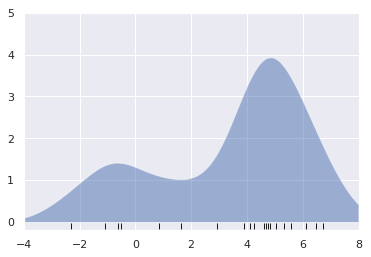

In [ ]:
from scipy.stats import norm

x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5]);

# a Gaussian kernel

#Kernel Density Estimation 

In order to do KDE we need to make our mind about two things:
  * kernel, which specifies the shape of the distribution placed at each point;
  * kernel bandwidth, which controls the size of the kernel at each point.


##Choosing kernel

On every data point $x_i$ we place a *kernel* function $K$. The kernel density estimate is then

$$
\hat{f}_h(x)=\frac{1}{Nh}\sum_{i=1}^N K\left(\frac{x-x_i}{h}\right),
$$

where $h$ is the scaling parameter called *bandwidth*.

In fact we can substitute equal factors of $1/N$ with weights that can emphasize one points against the others:

$$
\begin{aligned}
& \hat{f}_h(x)=\frac{1}{h}\sum_{i=1}^N w_i \cdot K\left(\frac{x-x_i}{h}\right), \\
&\sum_{i=1}^N w_i=1.
\end{aligned}
$$

The kernel function is typically
* non-negative: $K(x) \geq 0$;
* symmetric: $\,\,\,\,\, K(x)=K(-x)$;
* decreasing: $\,\,\,\, K'(x)\leq 0$;
* $\int K(x)dx=1$.

$K$ has either compact support or decrease sufficiently fast approaching infinity.

In the multivariate case (with $d$ dimensions) we have

$$
\hat{f}_h(x)=\frac{1}{Nh^d}\sum_{i=1}^N K\left(\frac{\|x-x_i\|}{h}\right),
$$

where $\|\cdot \|$ is a some kind of norm, for example $p$-norm

$$ 
\|x\|_p = \left(\sum_i |x_i|^p \right)^{1/p}
$$

Although it's fun to see how the choice of kernel and metric affects the outcome,  it doesn't matter so much when there are lots of points.

Nonetheless, what are our options when choosing the kernels?

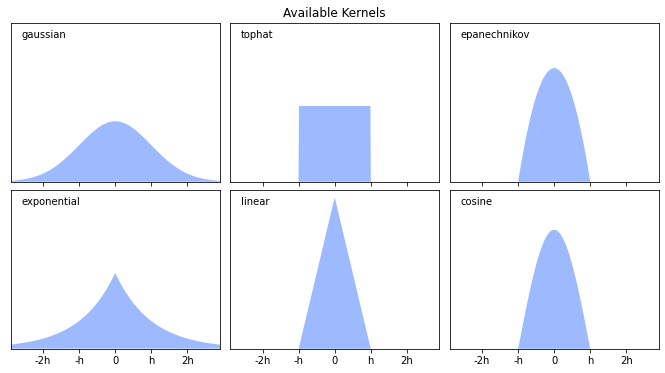

In [ ]:
#@title Available kernels

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#004aff61')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels');


$$
\begin{aligned}
& K_{\text{Gaussian}}(x;h) && \propto \quad e^{-\frac{x^2}{2h^2}}; \\
& K_{\text{Tophat}}(x;h) && \propto \quad 1, &&& \text{if   } \quad x<h; \\
& K_{\text{Epanechnikov}}(x;h) && \propto \quad 1-\frac{x^2}{h^2}; \\
& K_{\text{Exponential}}(x;h) && \propto \quad e^{-\frac{x}{h}}; \\
& K_{\text{Linear}}(x;h) && \propto \quad 1-\frac{|x|}{h}, &&& \text{if   } \quad |x|<h; \\
& K_{\text{Cosine}}(x;h) && \propto \quad \cos{\frac{\pi x}{2 h}}, &&& \text{if   } \quad x<h. \\
\end{aligned}
$$

you can choose those by setting `kernel` parameter:
* `kernel = 'gaussian';`
* `kernel = 'tophat';`
* `kernel = 'epanechnikov';`
* `kernel = 'exponential';`
* `kernel = 'linear';`
* `kernel = 'cosine'.`

##Choosing bandwidth

The choice of bandwidth within KDE is extremely important (the bias–variance trade-off).

   *  too narrow a bandwidth leads to a high-variance estimate (i.e., overfitting)
   * too wide a bandwidth leads to a high-bias estimate (i.e., underfitting)





In [ ]:
#@title ##Choose the bandwidth wisely
%%html
<svg width="260mm" height="70mm" version="1.1" viewBox="0 0 315.05 96.49" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".47826" fill-rule="evenodd" stroke="#000" stroke-opacity=".47826" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".47826" fill-rule="evenodd" stroke="#000" stroke-opacity=".47826" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(135.97 -.3308)">
  <g fill="none">
   <path d="m29.822 90.133h159.46" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-width=".3"/>
   <path d="m35.858 96.751v-95.829" marker-end="url(#e)" stroke="#000" stroke-width=".3"/>
   <path d="m41.01 70.592c4.2441 3.7731 22.852-34.943 32.506-34.207 12.132 1.4609 23.489 39.622 36.763 40.093 9.5252 0.23545 17.226-61.354 26.548-54.267 5.7634 4.9154 7.61 61.648 18.143 61.799 11.292-0.13936 10.922-28.68 14.764-28.693 2.8275 0.0201 5.9824 13.527 8.8595 21.133" stroke="#0000ce" stroke-opacity=".34783" stroke-width=".765"/>
  </g>
  <g fill-opacity=".37681">
   <circle cx="69.455" cy="90.209" r="1.1042"/>
   <circle cx="73.224" cy="90.171" r="1.1042"/>
   <circle cx="92.752" cy="90.085" r="1.1042"/>
   <circle cx="76.813" cy="90.193" r="1.1042"/>
   <circle cx="68.413" cy="90.193" r="1.1042"/>
   <circle cx="71.422" cy="90.206" r="1.1042"/>
   <circle cx="65.613" cy="90.263" r="1.1042"/>
   <circle cx="47.595" cy="90.1" r="1.1042"/>
   <circle cx="61.412" cy="90.193" r="1.1042"/>
   <circle cx="54.881" cy="90.18" r="1.1042"/>
   <circle cx="58.699" cy="90.037" r="1.1042"/>
   <circle cx="79.99" cy="90.193" r="1.1042"/>
   <circle cx="95.397" cy="90.063" r="1.1687"/>
   <circle cx="84.352" cy="90.247" r="1.1042"/>
   <circle cx="137.29" cy="90.063" r="1.1687"/>
   <circle cx="135.8" cy="90.12" r="1.1687"/>
   <circle cx="137.85" cy="90.12" r="1.1687"/>
   <circle cx="140.83" cy="90.04" r="1.1687"/>
   <circle cx="131.7" cy="90.091" r="1.1687"/>
   <circle cx="133.75" cy="90.063" r="1.1687"/>
   <circle cx="127.37" cy="90.034" r="1.1687"/>
   <circle cx="121.37" cy="90.04" r="1.1687"/>
   <circle cx="144.66" cy="90.04" r="1.1687"/>
   <circle cx="149.34" cy="90.04" r="1.1687"/>
   <circle cx="134.91" cy="90.201" r="1.1687"/>
   <circle cx="110.57" cy="90.04" r="1.1687"/>
   <circle cx="170.36" cy="89.933" r="1.2019"/>
   <circle cx="168.07" cy="89.991" r="1.2019"/>
   <circle cx="171.47" cy="89.874" r="1.2019"/>
   <circle cx="162.38" cy="89.933" r="1.2019"/>
   <circle cx="177.04" cy="89.991" r="1.2019"/>
   <circle cx="172.93" cy="89.991" r="1.2019"/>
   <circle cx="171.94" cy="89.933" r="1.2019"/>
   <circle cx="175.63" cy="90.108" r="1.2019"/>
   <circle cx="138.54" cy="90.12" r="1.1687"/>
   <circle cx="130.9" cy="90.063" r="1.1687"/>
  </g>
  <g fill="none">
   <path d="m46.801 71.618c30.07-8.5503 40.996-41.085 73.018-40.902 29.447 0.06562 46.227 40.106 58.775 45.735" stroke="#da0000" stroke-width=".765"/>
   <path d="m-143.71 90.203h159.46" marker-end="url(#c)" stroke="#000" stroke-width=".3"/>
   <path d="m-137.68 96.821v-95.829" marker-end="url(#d)" stroke="#000" stroke-width=".3"/>
   <path d="m-132.52 70.662c4.2441 3.7731 22.852-34.943 32.506-34.207 12.132 1.4609 23.489 39.622 36.763 40.093 9.5252 0.23545 17.226-61.354 26.548-54.267 5.7634 4.9154 7.61 61.648 18.143 61.799 11.292-0.13937 10.921-28.68 14.764-28.693 2.8275 0.0201 5.9824 13.527 8.8595 21.133" stroke="#0000ce" stroke-opacity=".34783" stroke-width=".765"/>
  </g>
  <g fill-opacity=".37681">
   <circle cx="-104.08" cy="90.279" r="1.1042"/>
   <circle cx="-100.31" cy="90.241" r="1.1042"/>
   <circle cx="-80.783" cy="90.155" r="1.1042"/>
   <circle cx="-96.722" cy="90.263" r="1.1042"/>
   <circle cx="-105.12" cy="90.263" r="1.1042"/>
   <circle cx="-102.11" cy="90.276" r="1.1042"/>
   <circle cx="-107.92" cy="90.333" r="1.1042"/>
   <circle cx="-125.94" cy="90.17" r="1.1042"/>
   <circle cx="-112.12" cy="90.263" r="1.1042"/>
   <circle cx="-118.65" cy="90.25" r="1.1042"/>
   <circle cx="-114.84" cy="90.108" r="1.1042"/>
   <circle cx="-93.545" cy="90.263" r="1.1042"/>
   <circle cx="-78.138" cy="90.133" r="1.1687"/>
   <circle cx="-89.183" cy="90.317" r="1.1042"/>
   <circle cx="-36.25" cy="90.133" r="1.1687"/>
   <circle cx="-37.738" cy="90.19" r="1.1687"/>
   <circle cx="-35.683" cy="90.19" r="1.1687"/>
   <circle cx="-32.701" cy="90.11" r="1.1687"/>
   <circle cx="-41.835" cy="90.161" r="1.1687"/>
   <circle cx="-39.783" cy="90.133" r="1.1687"/>
   <circle cx="-46.166" cy="90.104" r="1.1687"/>
   <circle cx="-52.165" cy="90.11" r="1.1687"/>
   <circle cx="-28.872" cy="90.11" r="1.1687"/>
   <circle cx="-24.198" cy="90.11" r="1.1687"/>
   <circle cx="-38.625" cy="90.271" r="1.1687"/>
   <circle cx="-62.965" cy="90.11" r="1.1687"/>
   <circle cx="-3.1792" cy="90.003" r="1.2019"/>
   <circle cx="-5.4651" cy="90.061" r="1.2019"/>
   <circle cx="-2.0656" cy="89.944" r="1.2019"/>
   <circle cx="-11.15" cy="90.003" r="1.2019"/>
   <circle cx="3.5025" cy="90.061" r="1.2019"/>
   <circle cx="-.60032" cy="90.061" r="1.2019"/>
   <circle cx="-1.5967" cy="90.003" r="1.2019"/>
   <circle cx="2.0958" cy="90.178" r="1.2019"/>
   <circle cx="-34.996" cy="90.19" r="1.1687"/>
   <circle cx="-42.633" cy="90.133" r="1.1687"/>
  </g>
  <path d="m-128.81 74.239c6.2068-31.91 11.53-40.334 15.426-40.768 4.9319-0.54928 3.8408 10.1 8.5352 10.09 6.4267-0.0136 6.8237-15.749 12.709-2.8386 9.494 20.826 20.199 43.243 28.754 34.981 5.5172-5.3281 10.228-34.126 12.884-43.783 3.5054-14.505 2.5579 6.3462 5.8414 6.3653 2.7953 0.0162 2.7655-18.87 5.7903-18.969 2.8513-0.0933 5.1517 26.804 7.4794 37.361 1.4068 6.3808 2.4537 3.591 4.574 1.7346 1.4085-1.2331 4.955 35.137 15.783 23.639 2.6944-2.8612 6.8721-33.2 8.8729-30.335 4.9103 7.0308 3.2286 19.616 7.2212 24.806" fill="none" stroke="#da0000" stroke-width=".765"/>
  <g transform="matrix(1.5,0,0,-1.5,-353.43,1179.7)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$x$$\n$$\\text{pdf estimate}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m245.77 724.32v0.0184l0.0186 0.0551 0.0124 0.0489 6e-3 0.0306 0.0122 0.0244 6e-3 0.0306 0.0122 0.0305 0.0122 0.0244 0.0245 0.0611 0.0184 0.0306 0.0123 0.0306 0.0551 0.0917 0.0244 0.0244 0.0184 0.0306 0.0977 0.0977 0.0611 0.0367 0.0184 6e-3 0.0122 6e-3 0.0184 6e-3 0.0122 6e-3 0.0368 0.0124 0.0183 6e-3h0.0184l0.0184 6e-3h0.0612c0.0244 0 0.17121 0 0.2996-0.0795-0.17119-0.0306-0.29348-0.18342-0.29348-0.32405 0-0.0978 0.0734-0.21401 0.23234-0.21401 0.13452 0 0.33018 0.11006 0.33018 0.35464 0 0.31183-0.36075 0.39743-0.56252 0.39743-0.35463 0-0.56864-0.32406-0.64201-0.45858-0.15286 0.39744-0.48304 0.45858-0.66035 0.45858-0.6359 0-0.97829-0.78263-0.97829-0.93548 0-0.0611 0.0611-0.0611 0.0672-0.0611 0.0551 0 0.0734 0.0122 0.0856 0.0672 0.20177 0.64201 0.60533 0.79488 0.81318 0.79488 0.11618 0 0.33018-0.0551 0.33018-0.40354 0-0.18955-0.10394-0.59921-0.33018-1.4491-0.0978-0.37297-0.31183-0.62977-0.58086-0.62977-0.0367 0-0.17732 0-0.29961 0.0795 0.14675 0.0305 0.28127 0.15897 0.28127 0.33018 0 0.15897-0.13452 0.20788-0.22624 0.20788-0.17731 0-0.33017-0.15897-0.33017-0.34852 0-0.28125 0.30571-0.40354 0.56864-0.40354 0.40354 0 0.62366 0.428 0.642 0.46469 0.0734-0.22623 0.2935-0.46469 0.66036-0.46469 0.62366 0 0.97216 0.78263 0.97216 0.93548 0 0.0611-0.0551 0.0611-0.0734 0.0611-0.0551 0-0.0672-0.0244-0.0795-0.0672-0.20178-0.64812-0.61144-0.79488-0.80713-0.79488-0.23845 0-0.33628 0.19566-0.33628 0.39744 0 0.13451 0.0367 0.26903 0.10394 0.53806z"/><g transform="matrix(0 .53732 -.53732 0 505.04 593.62)"><path d="m280.19 680.97v0.66l-1.43-0.11v-0.31c0.7 0 0.77-0.06 0.77-0.5v-4.64c0-0.45-0.11-0.45-0.77-0.45v-0.31c0.33 0.01 0.85 0.03 1.11 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.75l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.22c0.29 0.5 0.78 0.79 1.29 0.79 0.73 0 1.33-0.87 1.33-2 0-1.2-0.69-2.03-1.43-2.03-0.4 0-0.78 0.19-1.05 0.6l-0.14-0.13c0.05-0.16 0.47-0.69 1.23-0.69 1.18 0 2.22 0.97 2.22 2.25 0 1.26-0.97 2.25-2.08 2.25-0.78 0-1.2-0.44-1.4-0.66z"/><path d="m288.08 677.78v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.25-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.38 0 0.37 0.02 0.97 0.31 1.41 0.21 0.31 0.58 0.64 1.12 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.11-2.24 0.64 0 1.09 0.34 1.34 0.65z"/><path d="m291.57 681.52v1.15c0 0.87 0.48 1.35 0.92 1.35 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.22 0.16-0.42 0.43-0.42 0.29 0 0.44 0.2 0.44 0.43 0 0.37-0.37 0.7-0.9 0.7-0.7 0-1.55-0.53-1.55-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.2h1.14v0.31z"/><path d="m297.29 679.53 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m302.69 679.16h0.05l0.09-0.03h0.04l0.03-0.01 0.04-0.01 0.04-0.02 0.05-0.01 0.04-0.02 0.04-0.01 0.05-0.02 0.04-0.02 0.05-0.03 0.04-0.02 0.04-0.03 0.04-0.02 0.05-0.03 0.11-0.11 0.06-0.08 0.03-0.05 0.02-0.02 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06 0.01-0.02 0.01-0.03v-0.03l0.01-0.03v-0.06l0.01-0.04v-0.03c0-0.51-0.35-0.9-1.13-0.9-0.84 0-1.2 0.56-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.22 0.44-0.41 0.89-0.42 1.1-0.42 1.15 0 1.6 0.66 1.6 1.38 0 0.52-0.29 0.82-0.41 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.24-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.67-1.6-1.22 0-0.35 0.16-0.63 0.43-0.85 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m306.27 681.21h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.82-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m310.18 681.63-1.39-0.11v-0.31c0.65 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m310.22 683.36v0.08l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.03 0.01-0.04 0.02-0.02 0.02-0.02 0.01h-0.03l-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.52 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m312.28 680.65v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m322.81 677.99v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.03 0.02-0.04 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.08-0.12 0.03-0.03 0.02-0.03 0.06-0.06 0.15-0.1 0.04-0.02 0.03-0.01 0.16-0.04h0.09c0.21 0 0.81 0.14 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.24-0.64-0.35-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.12 0-0.3 0.19-0.47 0.45-0.47 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.28-1.17-1.28-0.49 0-0.9 0.34-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.8 0.96-1.05 1.59-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m326.19 681.21h1.43v0.31h-1.43v1.83h-0.24c-0.02-0.82-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m329.45 679.53 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/></g><path d="m361.42 724.08v0.0184l6e-3 0.0183 0.0124 0.0367 0.0124 0.0489 6e-3 0.0306 0.0122 0.0244 6e-3 0.0306 0.0122 0.0305 0.0122 0.0244 0.0245 0.0611 0.0184 0.0306 0.0122 0.0306 0.0551 0.0917 0.0244 0.0244 0.0184 0.0306 0.0977 0.0977 0.0611 0.0367 0.0184 6e-3 0.0122 6e-3 0.0184 6e-3 0.0122 6e-3 0.0551 0.0186h0.0183l0.0184 6e-3h0.0612c0.0244 0 0.1712 0 0.2996-0.0795-0.1712-0.0306-0.29349-0.18342-0.29349-0.32405 0-0.0978 0.0734-0.21401 0.23235-0.21401 0.13451 0 0.33018 0.11006 0.33018 0.35464 0 0.31183-0.36075 0.39743-0.56253 0.39743-0.35463 0-0.56863-0.32406-0.64201-0.45858-0.15285 0.39744-0.48303 0.45858-0.66034 0.45858-0.6359 0-0.97829-0.78263-0.97829-0.93548 0-0.0611 0.0611-0.0611 0.0672-0.0611 0.0551 0 0.0734 0.0122 0.0856 0.0672 0.20177 0.642 0.60532 0.79487 0.81318 0.79487 0.11617 0 0.33018-0.0551 0.33018-0.40354 0-0.18955-0.10395-0.59921-0.33018-1.4491-0.0978-0.37297-0.31183-0.62977-0.58086-0.62977-0.0367 0-0.17732 0-0.29961 0.0795 0.14675 0.0306 0.28127 0.15897 0.28127 0.33018 0 0.15897-0.13452 0.20788-0.22624 0.20788-0.17731 0-0.33017-0.15897-0.33017-0.34851 0-0.28126 0.30571-0.40355 0.56863-0.40355 0.40355 0 0.62366 0.428 0.64201 0.46469 0.0734-0.22623 0.29349-0.46469 0.66035-0.46469 0.62367 0 0.97216 0.78263 0.97216 0.93548 0 0.0611-0.0551 0.0611-0.0734 0.0611-0.055 0-0.0672-0.0244-0.0795-0.0672-0.20177-0.64811-0.61143-0.79487-0.80713-0.79487-0.23845 0-0.33629 0.19565-0.33629 0.39743 0 0.13451 0.0367 0.26903 0.10395 0.53806z"/><g transform="matrix(0 .53732 -.53732 0 620.35 594.53)"><path d="m280.19 680.97v0.66l-1.43-0.11v-0.31c0.7 0 0.77-0.06 0.77-0.5v-4.64c0-0.45-0.11-0.45-0.77-0.45v-0.31c0.33 0.01 0.85 0.03 1.11 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.75l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.22c0.29 0.5 0.78 0.79 1.29 0.79 0.73 0 1.33-0.87 1.33-2 0-1.2-0.69-2.03-1.43-2.03-0.4 0-0.78 0.19-1.05 0.6l-0.14-0.13c0.05-0.16 0.47-0.69 1.23-0.69 1.18 0 2.22 0.97 2.22 2.25 0 1.26-0.97 2.25-2.08 2.25-0.78 0-1.2-0.44-1.4-0.66z"/><path d="m288.08 677.78v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.25-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.38 0 0.37 0.02 0.97 0.31 1.41 0.21 0.31 0.58 0.64 1.12 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.11-2.24 0.64 0 1.09 0.34 1.34 0.65z"/><path d="m291.57 681.52v1.15c0 0.87 0.48 1.35 0.92 1.35 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.22 0.16-0.42 0.43-0.42 0.29 0 0.44 0.2 0.44 0.43 0 0.37-0.37 0.7-0.9 0.7-0.7 0-1.55-0.53-1.55-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.2h1.14v0.31z"/><path d="m297.29 679.53 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m302.69 679.16h0.05l0.09-0.03h0.04l0.03-0.01 0.04-0.01 0.04-0.02 0.05-0.01 0.04-0.02 0.04-0.01 0.05-0.02 0.04-0.02 0.05-0.03 0.04-0.02 0.04-0.03 0.04-0.02 0.05-0.03 0.11-0.11 0.06-0.08 0.03-0.05 0.02-0.02 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06 0.01-0.02 0.01-0.03v-0.03l0.01-0.03v-0.06l0.01-0.04v-0.03c0-0.51-0.35-0.9-1.13-0.9-0.84 0-1.2 0.56-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.22 0.44-0.41 0.89-0.42 1.1-0.42 1.15 0 1.6 0.66 1.6 1.38 0 0.52-0.29 0.82-0.41 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.24-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.67-1.6-1.22 0-0.35 0.16-0.63 0.43-0.85 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m306.27 681.21h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.82-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m310.18 681.63-1.39-0.11v-0.31c0.65 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m310.22 683.36v0.08l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.03 0.01-0.04 0.02-0.02 0.02-0.02 0.01h-0.03l-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.52 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m312.28 680.65v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m322.81 677.99v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.03 0.02-0.04 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.08-0.12 0.03-0.03 0.02-0.03 0.06-0.06 0.15-0.1 0.04-0.02 0.03-0.01 0.16-0.04h0.09c0.21 0 0.81 0.14 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.24-0.64-0.35-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.12 0-0.3 0.19-0.47 0.45-0.47 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.28-1.17-1.28-0.49 0-0.9 0.34-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.8 0.96-1.05 1.59-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m326.19 681.21h1.43v0.31h-1.43v1.83h-0.24c-0.02-0.82-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m329.45 679.53 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/></g></g><g id="content" transform="matrix(1.5,0,0,-1.5,-353.26,1181.5)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Low bandwidth = overfit}$$\n$$\\text{Large bandwidth = underfit}$$\n" xml:space="preserve"><g fill-opacity=".81643" stroke-width="0"><g stroke-width="0"><path d="m351.68 266.43h-0.0866c-0.0382 0.34994-0.0866 0.77952-0.69288 0.77952h-0.28409c-0.16284 0-0.16978-0.024-0.16978-0.13857v-1.8328c0-0.11779 0-0.1663 0.32914-0.1663h0.11435v-0.10733c-0.12472 0.0139-0.43997 0.0139-0.58205 0.0139-0.13512 0-0.40534 0-0.52659-0.0139v0.10733h0.0834c0.26677 0 0.27367 0.0381 0.27367 0.16285v1.812c0 0.12473-6e-3 0.16282-0.27367 0.16282h-0.0834v0.10734h1.8016z"/><path d="m353.45 266.58v-0.0381l-3e-3 -0.0414-6e-3 -0.0414-6e-3 -0.0381-5e-3 -0.0381-9e-3 -0.0381-0.0139-0.0382-0.0139-0.0383-0.0139-0.0346-0.0174-0.0347-0.0174-0.0346-0.0413-0.0623-0.0239-0.0313-0.0239-0.0276-0.024-0.0278-0.0552-0.0553-0.0278-0.0207-0.0313-0.0239-0.0624-0.0413-0.0313-0.0174-0.0347-0.0174-0.0346-0.0139-0.0347-9e-3 -0.0381-0.0139-0.0347-5e-3 -0.0381-6e-3 -0.0383-6e-3 -0.0381-3e-3h-0.0383l-3e-3 0.0762c0.14896 0 0.29794 0.0761 0.38802 0.22173 0.0901 0.14898 0.0901 0.34993 0.0901 0.47812 0 0.12472 0 0.31178-0.0761 0.46423-0.0761 0.15247-0.22864 0.2529-0.3984 0.2529-0.14899 0-0.30141-0.0728-0.39495-0.22863-0.0866-0.15247-0.0866-0.36378-0.0866-0.4885 0-0.13166 0-0.31873 0.0833-0.4712 0.0936-0.15588 0.25637-0.22865 0.39496-0.22865l3e-3 -0.0762c-0.43309 0-0.76912 0.37416-0.76912 0.80378 0 0.44691 0.36027 0.77606 0.76566 0.77606 0.41574 0 0.76564-0.33605 0.76564-0.77606z"/><path d="m355.59 266.16 6e-3 -0.0139 3e-3 -0.0174 0.0145-0.0279 6e-3 -9e-3 6e-3 -0.0139 5e-3 -9e-3 9e-3 -0.0139 6e-3 -9e-3 6e-3 -5e-3 9e-3 -9e-3 6e-3 -5e-3 6e-3 -9e-3 9e-3 -6e-3 9e-3 -5e-3 6e-3 -6e-3 9e-3 -6e-3 9e-3 -3e-3 9e-3 -5e-3 6e-3 -3e-3 0.0206-6e-3 9e-3 -3e-3 0.0206-6e-3h9e-3l9e-3 -3e-3h0.0139l9e-3 -3e-3h0.0311v-0.10734c-0.0728 6e-3 -0.17322 9e-3 -0.24944 9e-3 -0.10046 0-0.25637-6e-3 -0.3222-9e-3v0.10734c0.12472 3e-3 0.20094 0.0622 0.20094 0.16282 0 0.0209 0 0.0278-0.0174 0.0728l-0.31526 0.88346-0.343-0.96314c-0.0139-0.0414-0.0174-0.0487-0.0174-0.0657 0-0.09 0.1351-0.09 0.20438-0.09v-0.10733c-0.10047 3e-3 -0.27714 9e-3 -0.35685 9e-3 -0.10388 0-0.20439-3e-3 -0.30835-9e-3v0.10733c0.1282 0 0.18365 6e-3 0.21828 0.052 0.0174 0.0208 0.0554 0.12128 0.0797 0.18707l-0.29797 0.83495-0.32911-0.92156c-0.0174-0.0414-0.0174-0.0487-0.0174-0.0624 0-0.09 0.13513-0.09 0.20442-0.09v-0.10733c-0.10388 3e-3 -0.29795 9e-3 -0.37765 9e-3 -0.0139 0-0.19746-3e-3 -0.3222-9e-3v0.10733c0.17327 0 0.21481 9e-3 0.2564 0.11779l0.43651 1.2195c0.0174 0.0487 0.0279 0.0759 0.0728 0.0759s0.0521-0.0206 0.0693-0.0693l0.34992-0.97354 0.34993 0.97699c0.0139 0.0383 0.0239 0.0658 0.0693 0.0658 0.0449 0 0.0554-0.0313 0.0693-0.0658z"/><path d="m357.69 266.03v-1.0913l-0.49546 0.0347v0.10733c0.23907 0 0.26679 0.024 0.26679 0.19401v2.051h0.0866c3e-3 -3e-3 0.0313-0.0521 0.12473-0.21481 0.0521 0.0797 0.19745 0.25292 0.45384 0.25292l-0.0139-0.076c-0.15592 0-0.28062-0.0833-0.36377-0.21134-0.0487-0.0693-0.0487-0.0797-0.0487-0.14204v-0.71025c0-0.0658 0-0.0694 0.0381-0.12467 0.13513-0.19059 0.32566-0.21829 0.40883-0.21829 0.15589 0 0.28063 0.09 0.36377 0.21829 0.0901 0.142 0.10047 0.3395 0.10047 0.47809 0 0.12817-6e-3 0.33603-0.10732 0.49196-0.0729 0.10388-0.2044 0.21825-0.39149 0.21825l0.0139 0.076c0.4123 0 0.76912-0.33606 0.76912-0.78297 0-0.43653-0.33602-0.77604-0.731-0.77604-0.27024 0-0.41922 0.16282-0.47464 0.22517z"/><path d="m360.16 267.06 3e-3 9e-3v0.0139l3e-3 0.0139 3e-3 9e-3 6e-3 0.0279 3e-3 9e-3 6e-3 0.0139 3e-3 0.0139 6e-3 9e-3 3e-3 9e-3 6e-3 0.0139 6e-3 9e-3 5e-3 9e-3 9e-3 9e-3 5e-3 9e-3 9e-3 9e-3 6e-3 9e-3 9e-3 6e-3 9e-3 9e-3 0.027 0.018 0.0139 6e-3 9e-3 3e-3 0.0139 6e-3 0.0139 3e-3 9e-3 3e-3 0.0139 3e-3 0.0173 3e-3h0.0279c0.0728 0 0.28411-0.0487 0.28411-0.32568v-0.19401h-0.0867v0.19401c0 0.19746-0.0866 0.21826-0.12471 0.21826-0.11435 0-0.12818-0.15244-0.12818-0.16974v-0.68947c0-0.14547 0-0.2806-0.12473-0.40532-0.13511-0.13512-0.30834-0.19058-0.47117-0.19058-0.28408 0-0.52311 0.16285-0.52311 0.38804 0 0.10389 0.0693 0.16283 0.15933 0.16283 0.0971 0 0.15937-0.0693 0.15937-0.15937 0-0.0414-0.0174-0.15244-0.17668-0.15935 0.0936-0.11779 0.26329-0.15589 0.37416-0.15589 0.16976 0 0.36379 0.1351 0.36379 0.43995v0.54407c0 0.32565-0.24598 0.44344-0.40189 0.44344-0.16975 0-0.31181-0.12125-0.31181-0.29101 0-0.19055 0.14548-0.47466 0.7137-0.49543v-0.0728c-0.17325 9e-3 -0.41575 0.0207-0.63401 0.12126-0.25986 0.11779-0.34648 0.29793-0.34648 0.45038 0 0.27716 0.33608 0.36376 0.55436 0.36376 0.22519 0 0.38457-0.13857 0.45037-0.29794z"/><path d="m361.12 266.14v0.92499c0 0.15244-0.0381 0.15244-0.27022 0.15244v0.10734c0.12124-3e-3 0.29792-9e-3 0.39146-9e-3 0.0901 0 0.27024 6e-3 0.38803 9e-3v-0.10734c-0.23212 0-0.27023 0-0.27023-0.15244v-0.63401c0-0.36028 0.24598-0.55085 0.46771-0.55085 0.21479 0 0.2529 0.18362 0.2529 0.3811v0.80376c0 0.15244-0.0381 0.15244-0.27022 0.15244v0.10734c0.12126-3e-3 0.29796-9e-3 0.39149-9e-3 0.09 0 0.27023 6e-3 0.38803 9e-3v-0.10734c-0.18017 0-0.26678 0-0.27025-0.10387v-0.65479c0-0.29795 0-0.40535-0.10732-0.52663-0.0487-0.0588-0.16284-0.12819-0.3603-0.12819-0.2529 0-0.41573 0.14898-0.51276 0.36034v-0.36036l-0.48847 0.0381v0.10732c0.24249 0 0.27022 0.0239 0.27022 0.19055z"/><path d="m363.97 267.13v0.22868l0.50583-0.0381v-0.10734c-0.23904 0-0.26676-0.024-0.26676-0.19052v-2.0892l-0.49889 0.0346v0.10732c0.24251 0 0.27022 0.0239 0.27022 0.19402v0.7414c-0.10047-0.12124-0.24941-0.21133-0.43652-0.21133l0.0139 0.076c0.12126 0 0.26675 0.052 0.37416 0.20441 0.0381 0.0588 0.0381 0.0658 0.0381 0.12819v0.70676c0 0.0623 0 0.0693-0.0381 0.12818-0.10388 0.16283-0.25985 0.23906-0.40881 0.23906-0.15592 0-0.28062-0.09-0.36379-0.21827-0.0866-0.14204-0.0969-0.33952-0.0969-0.48156 0-0.12473 6e-3 -0.3326 0.10733-0.4885 0.0693-0.10387 0.20094-0.21827 0.38805-0.21827l-0.0139-0.076c-0.40535 0-0.76912 0.33608-0.76912 0.77951 0 0.44 0.33952 0.77951 0.73102 0.77951 0.22173 0 0.37763-0.11777 0.46422-0.22864z"/><path d="m366.71 266.16 3e-3 -0.0139 6e-3 -0.0174 0.0146-0.0279 6e-3 -9e-3 6e-3 -0.0139 6e-3 -9e-3 6e-3 -0.0139 9e-3 -9e-3 6e-3 -5e-3 6e-3 -9e-3 9e-3 -5e-3 6e-3 -9e-3 9e-3 -6e-3 9e-3 -5e-3 6e-3 -6e-3 9e-3 -6e-3 9e-3 -3e-3 9e-3 -5e-3 6e-3 -3e-3 0.0206-6e-3 0.027-9e-3h9e-3l9e-3 -3e-3h0.0139l9e-3 -3e-3h0.0346v-0.10734c-0.0761 6e-3 -0.17669 9e-3 -0.2529 9e-3 -0.10047 0-0.25638-6e-3 -0.3222-9e-3v0.10734c0.12471 3e-3 0.20093 0.0622 0.20093 0.16282 0 0.0209 0 0.0278-0.0174 0.0728l-0.31529 0.88346-0.34296-0.96314c-0.0139-0.0414-0.0174-0.0487-0.0174-0.0657 0-0.09 0.13512-0.09 0.20441-0.09v-0.10733c-0.10047 3e-3 -0.27714 9e-3 -0.35683 9e-3 -0.10734 0-0.20441-3e-3 -0.30835-9e-3v0.10733c0.12818 0 0.18359 6e-3 0.21827 0.052 0.0139 0.0208 0.0553 0.12128 0.0761 0.18707l-0.2945 0.83495-0.32913-0.92156c-0.0174-0.0414-0.0174-0.0487-0.0174-0.0624 0-0.09 0.13514-0.09 0.20443-0.09v-0.10733c-0.10387 3e-3 -0.29797 9e-3 -0.37763 9e-3 -0.0139 0-0.19748-3e-3 -0.32222-9e-3v0.10733c0.17323 0 0.21482 9e-3 0.25637 0.11779l0.43653 1.2195c0.0174 0.0487 0.0278 0.0759 0.0728 0.0759 0.0449 0 0.0521-0.0206 0.0693-0.0693l0.34646-0.97354 0.35337 0.97699c0.0139 0.0383 0.0242 0.0658 0.0693 0.0658 0.0449 0 0.0554-0.0313 0.0693-0.0658z"/><path d="m367.67 265.8-0.48159 0.0381v0.10733c0.2252 0 0.25641 0.0207 0.25641 0.18708v0.92852c0 0.15243-0.0381 0.15243-0.27026 0.15243v0.10734c0.11084-3e-3 0.29796-9e-3 0.37764-9e-3 0.12127 0 0.2425 6e-3 0.36031 9e-3v-0.10734c-0.22864 0-0.24251-0.0174-0.24251-0.14894z"/><path d="m367.69 265.2v-0.0311l-3e-3 -6e-3v-9e-3l-3e-3 -9e-3 -3e-3 -6e-3 -3e-3 -9e-3 -6e-3 -0.0146-6e-3 -6e-3 -3e-3 -9e-3 -3e-3 -6e-3 -6e-3 -6e-3 -6e-3 -3e-3 -6e-3 -6e-3 -3e-3 -6e-3 -5e-3 -3e-3 -6e-3 -5e-3 -6e-3 -3e-3 -9e-3 -6e-3 -0.0217-9e-3 -9e-3 -3e-3h-6e-3l-9e-3 -3e-3 -6e-3 -3e-3h-0.0175l-9e-3 -3e-3h-6e-3c-0.10733 0-0.1836 0.0936-0.1836 0.18362 0 0.0936 0.0762 0.18361 0.1836 0.18361 0.0969 0 0.18017-0.0727 0.18017-0.18361z"/><path d="m369.34 267.13v0.22868l0.50582-0.0381v-0.10734c-0.24253 0-0.27024-0.024-0.27024-0.19052v-2.0892l-0.49543 0.0346v0.10732c0.24253 0 0.27023 0.0239 0.27023 0.19402v0.7414c-0.10047-0.12124-0.24942-0.21133-0.43653-0.21133l0.0139 0.076c0.12126 0 0.26677 0.052 0.37418 0.20441 0.0381 0.0588 0.0381 0.0658 0.0381 0.12819v0.70676c0 0.0623 0 0.0693-0.0381 0.12818-0.10389 0.16283-0.25987 0.23906-0.40884 0.23906-0.1559 0-0.28061-0.09-0.36376-0.21827-0.0901-0.14204-0.10047-0.33952-0.10047-0.48156 0-0.12473 6e-3 -0.3326 0.10734-0.4885 0.0727-0.10387 0.2044-0.21827 0.39148-0.21827l-0.0139-0.076c-0.40882 0-0.7691 0.33608-0.7691 0.77951 0 0.44 0.33605 0.77951 0.73101 0.77951 0.22172 0 0.37761-0.11777 0.46424-0.22864z"/><path d="m370.54 265.95h0.49197v-0.10734h-0.49197v-0.634h-0.0867c-3e-3 0.28063-0.10733 0.65133-0.44689 0.66518v0.0762h0.29448v0.94932c0 0.42266 0.32218 0.46424 0.44691 0.46424 0.24252 0 0.33951-0.24599 0.33951-0.46424v-0.19748h-0.0866v0.19056c0 0.2529-0.10388 0.38457-0.22865 0.38457-0.23212 0-0.23212-0.31182-0.23212-0.37071z"/><path d="m371.66 267.06v0.049l-3e-3 9e-3v9e-3l-3e-3 9e-3v6e-3l-3e-3 9e-3 -6e-3 0.0145-6e-3 3e-3 -3e-3 6e-3 -6e-3 3e-3 -5e-3 3e-3 -3e-3 6e-3 -9e-3 3e-3h-6e-3l-9e-3 3e-3 -6e-3 3e-3h-0.0139l-9e-3 3e-3h-0.0248l-6e-3 3e-3h-0.13248v0.10732c0.12123-3e-3 0.29445-9e-3 0.388-9e-3 0.0901 0 0.27025 6e-3 0.38802 9e-3v-0.10732c-0.23212 0-0.27023 0-0.27023-0.15243v-0.63401c0-0.36033 0.246-0.55088 0.46772-0.55088 0.21826 0 0.25637 0.18363 0.25637 0.38111v0.80378c0 0.15243-0.0381 0.15243-0.27024 0.15243v0.10732c0.12124-3e-3 0.29797-9e-3 0.38805-9e-3 0.0901 0 0.27022 6e-3 0.38799 9e-3v-0.10732c-0.18015 0-0.26674 0-0.27022-0.10388v-0.6548c0-0.29794 0-0.40535-0.10733-0.52661-0.045-0.0587-0.15937-0.12818-0.36031-0.12818-0.29102 0-0.44345 0.2044-0.50235 0.33605v-1.2008l-0.49541 0.0346v0.10734c0.23904 0 0.26675 0.0239 0.26675 0.19402z"/><path d="m376.73 266.19h0.0526l3e-3 -3e-3h0.0145l3e-3 -3e-3h5e-3l3e-3 -3e-3h3e-3l6e-3 -6e-3h3e-3l9e-3 -9e-3v-3e-3l3e-3 -3e-3v-3e-3l3e-3 -3e-3v-9e-3h3e-3v-0.0181c0-0.0694-0.0657-0.0694-0.11434-0.0694h-2.0683c-0.0487 0-0.11434 0-0.11434 0.0694 0 0.0693 0.0657 0.0693 0.11778 0.0693z"/><path d="m376.73 266.86h0.0378l3e-3 -3e-3h0.0217l3e-3 -3e-3h3e-3l6e-3 -3e-3h3e-3l3e-3 -3e-3h3e-3l9e-3 -9e-3h3e-3v-3e-3h3e-3v-6e-3h3e-3v-3e-3l3e-3 -3e-3v-9e-3l3e-3 -3e-3v-0.0145c0-0.0693-0.066-0.0693-0.11778-0.0693h-2.059c-0.0521 0-0.11779 0-0.11779 0.0693 0 0.0694 0.0657 0.0694 0.11435 0.0694z"/><path d="m379.81 266.58v-0.0381l-6e-3 -0.083-6e-3 -0.0381-0.018-0.0762-9e-3 -0.0382-0.0139-0.0383-0.0174-0.0346-0.0174-0.0347-0.0174-0.0346-0.0414-0.0626-0.0206-0.0313-0.024-0.0278-0.0277-0.0277-0.024-0.0278-0.0278-0.0278-0.0313-0.0208-0.0278-0.0239-0.0313-0.0206-0.0346-0.0207-0.0313-0.0174-0.0347-0.0174-0.0347-0.0139-0.0346-9e-3 -0.0347-0.0139-0.0383-5e-3 -0.038-6e-3 -0.0383-6e-3 -0.0382-3e-3h-0.0381l-3e-3 0.0761c0.15242 0 0.30143 0.0762 0.39149 0.22169 0.09 0.149 0.09 0.34995 0.09 0.47813 0 0.12473 0 0.31181-0.0761 0.46424-0.0759 0.15248-0.22865 0.2529-0.40188 0.2529-0.14896 0-0.3014-0.0728-0.39497-0.22863-0.0866-0.15245-0.0866-0.36378-0.0866-0.48851 0-0.13165 0-0.31873 0.0833-0.47119 0.0936-0.15589 0.25638-0.22863 0.39495-0.22863l3e-3 -0.0761c-0.43306 0-0.76566 0.37415-0.76566 0.80377 0 0.4469 0.35685 0.77605 0.76218 0.77605 0.41923 0 0.76567-0.33606 0.76567-0.77605z"/><path d="m381.26 266.17 3e-3 -6e-3v-6e-3l3e-3 -9e-3 3e-3 -6e-3 6e-3 -9e-3 3e-3 -6e-3 3e-3 -9e-3 6e-3 -9e-3 3e-3 -6e-3 5e-3 -9e-3 3e-3 -9e-3 6e-3 -9e-3 6e-3 -6e-3 5e-3 -9e-3 0.028-0.0281 9e-3 -5e-3 9e-3 -9e-3 9e-3 -5e-3 9e-3 -6e-3 0.0416-0.0217 0.0139-3e-3 0.0139-6e-3 0.0522-9e-3h9e-3l9e-3 -3e-3h0.0372v-0.10733c-0.0797 6e-3 -0.17669 9e-3 -0.25637 9e-3 -0.0834 0-0.24253-5e-3 -0.30143-9e-3v0.10733c0.1282 3e-3 0.16631 0.0797 0.16631 0.14551 0 0.0313-5e-3 0.0449-0.0208 0.0833l-0.35336 0.87652-0.38803-0.95963c-0.0207-0.045-0.0207-0.0487-0.0207-0.0588 0-0.0867 0.1351-0.0867 0.19746-0.0867v-0.10732c-0.10388 3e-3 -0.29794 9e-3 -0.37763 9e-3 -0.09 0-0.22866-3e-3 -0.33258-9e-3v0.10732c0.21826 0 0.23213 0.0206 0.27714 0.1247l0.49543 1.223c0.0208 0.0486 0.0276 0.0657 0.0727 0.0657s0.0588-0.0313 0.0728-0.0657z"/><path d="m381.93 266.52 3e-3 -0.0693c0.0207-0.51274 0.31179-0.59935 0.42959-0.59935 0.35686 0 0.3915 0.46426 0.3915 0.59935h-0.82109l-3e-3 0.0693h0.96658c0.0761 0 0.0866 0 0.0866-0.0693 0-0.34297-0.18708-0.67559-0.62015-0.67559-0.4019 0-0.71716 0.3534-0.71716 0.78646 0 0.4608 0.36032 0.79338 0.75872 0.79338 0.42268 0 0.57859-0.3811 0.57859-0.44693 0-0.0347-0.0278-0.0414-0.0451-0.0414-0.0313 0-0.0382 0.0208-0.0449 0.0487-0.12123 0.35337-0.43305 0.35337-0.4677 0.35337-0.17324 0-0.31181-0.1039-0.39148-0.22864-0.10389-0.16631-0.10389-0.39496-0.10389-0.51967z"/><path d="m383.65 266.17v-0.37765l-0.48159 0.0381v0.10732c0.24252 0 0.27025 0.0239 0.27025 0.19053v0.92502c0 0.15243-0.0382 0.15243-0.27025 0.15243v0.10733c0.13514-3e-3 0.29796-9e-3 0.39496-9e-3 0.13859 0 0.30142 0 0.43998 9e-3v-0.10733h-0.0727c-0.25636 0-0.26329-0.0382-0.26329-0.16281v-0.52661c0-0.34301 0.14551-0.64787 0.4088-0.64787 0.024 0 0.0313 0 0.0383 3e-3 -9e-3 3e-3 -0.0797 0.045-0.0797 0.13163 0 0.0969 0.0727 0.14898 0.14897 0.14898 0.0623 0 0.14899-0.0414 0.14899-0.15245 0-0.10732-0.10733-0.20784-0.25638-0.20784-0.25291 0-0.37763 0.22864-0.42612 0.37761z"/><path d="m385.57 265.95h0.0535l0.0139 3e-3h9e-3l9e-3 3e-3h6e-3l9e-3 3e-3 6e-3 3e-3 9e-3 3e-3 0.0145 6e-3 0.0217 0.0217 3e-3 6e-3 3e-3 3e-3 3e-3 6e-3 3e-3 9e-3 3e-3 6e-3v6e-3l3e-3 9e-3v6e-3l3e-3 9e-3v0.0346l3e-3 9e-3v0.95619c0 0.15245-0.0383 0.15245-0.27021 0.15245v0.10732c0.11435-3e-3 0.29794-9e-3 0.38108-9e-3 0.0867 0 0.25638 6e-3 0.38456 9e-3v-0.10732c-0.23209 0-0.26676 0-0.26676-0.15245v-1.2646l-0.43652 0.0313c-0.0554 3e-3 -0.0588 6e-3 -0.0624 6e-3 -6e-3 3e-3 -0.0139 3e-3 -0.0624 3e-3h-0.40882v-0.38803c0-0.34298 0.29797-0.48155 0.51278-0.48155 0.10387 0 0.22862 0.0347 0.29793 0.11435-0.14205 6e-3 -0.16283 0.10389-0.16283 0.15935 0 0.11437 0.09 0.15938 0.1559 0.15938 0.0797 0 0.15588-0.0554 0.15588-0.15938 0-0.20441-0.18706-0.34645-0.44344-0.34645-0.32221 0-0.7345 0.17322-0.7345 0.55087v0.39147h-0.2702v0.10733h0.2702v1.1155c0 0.15244-0.0383 0.15244-0.26674 0.15244v0.10731c0.11082-3e-3 0.29447-9e-3 0.3811-9e-3 0.0866 0 0.25636 5e-3 0.38456 9e-3v-0.10731c-0.23212 0-0.27025 0-0.27025-0.15244v-1.1155z"/><path d="m386.94 265.95h0.49196v-0.10734h-0.49196v-0.634h-0.0866c-3e-3 0.28063-0.10733 0.65133-0.44694 0.66518v0.0762h0.29447v0.94932c0 0.42266 0.32221 0.46424 0.44694 0.46424 0.24252 0 0.33953-0.24599 0.33953-0.46424v-0.19748h-0.0866v0.19056c0 0.2529-0.10046 0.38457-0.22867 0.38457-0.23212 0-0.23212-0.31182-0.23212-0.37071z"/></g><path d="m426.34 266.6h-0.0882c-0.0388 0.35648-0.0882 0.79767-0.70942 0.79767h-0.28943c-0.16588 0-0.16943-0.0247-0.16943-0.14119v-1.8706c0-0.12002 0-0.16589 0.33178-0.16589h0.11648v-0.10942c-0.12706 0.01-0.44471 0.01-0.58943 0.01-0.13765 0-0.41295 0-0.53648-0.01v0.10942h0.0848c0.27176 0 0.27882 0.0388 0.27882 0.16235v1.8494c0 0.12706-6e-3 0.1659-0.27882 0.1659h-0.0848v0.10588h1.8354z"/><path d="m427.66 267.24v0.014l3e-3 0.01 3e-3 0.014v0.014l3e-3 0.01 3e-3 0.014 6e-3 0.014 3e-3 0.01 6e-3 0.014 3e-3 0.01 6e-3 0.014 0.024 0.04 0.01 0.01 6e-3 0.01 0.026 0.026 0.01 6e-3 0.014 6e-3 0.02 0.012 0.014 6e-3 0.01 3e-3 0.056 0.012h0.0318c0.0742 0 0.28589-0.0493 0.28589-0.33179v-0.19765h-0.0882v0.19765c0 0.20472-0.0848 0.22589-0.12353 0.22589-0.11647 0-0.1306-0.15883-0.1306-0.17647v-0.70238c0-0.14823 0-0.28236-0.12706-0.41293-0.13765-0.13766-0.31412-0.19414-0.48355-0.19414-0.28941 0-0.52942 0.16589-0.52942 0.3953 0 0.10589 0.0706 0.16589 0.15883 0.16589 0.0989 0 0.16236-0.0706 0.16236-0.15882 0-0.0423-0.0178-0.15884-0.18-0.16235 0.0953-0.12355 0.26823-0.16237 0.38118-0.16237 0.17294 0 0.37412 0.13765 0.37412 0.44825v0.55421c0 0.33529-0.25413 0.45176-0.41294 0.45176-0.17295 0-0.31766-0.11999-0.31766-0.29646 0-0.19413 0.14823-0.48355 0.7306-0.50472v-0.0742c-0.18001 0.01-0.42705 0.0212-0.64942 0.12707-0.26117 0.12-0.34943 0.30001-0.34943 0.45531 0 0.28234 0.33883 0.37059 0.56121 0.37059 0.23293 0 0.39529-0.14119 0.46235-0.30354z"/><path d="m428.83 266.34v-0.38825l-0.48706 0.0388v0.10942c0.24706 0 0.2753 0.0247 0.2753 0.19765v0.93885c0 0.15882-0.0388 0.15882-0.2753 0.15882v0.10588c0.13765-3e-3 0.30353-0.01 0.39883-0.01 0.14116 0 0.30705 0 0.44825 0.01v-0.10588h-0.0742c-0.26117 0-0.26824-0.0388-0.26824-0.16589v-0.54c0-0.34942 0.14825-0.66001 0.41648-0.66001 0.0247 0 0.0318 0 0.0389 3e-3 -0.01 3e-3 -0.0811 0.0459-0.0811 0.13765 0 0.0989 0.0742 0.14824 0.15176 0.14824 0.0637 0 0.15177-0.0389 0.15177-0.15177 0-0.11295-0.1094-0.2153-0.26117-0.2153-0.25766 0-0.38473 0.23648-0.43413 0.38824z"/><path d="m430 267.04v-0.03l3e-3 -3e-3v-9e-3l3e-3 -6e-3v-9e-3l3e-3 -6e-3v-3e-3l6e-3 -0.012v-6e-3l3e-3 -6e-3 3e-3 -3e-3 0.015-0.03 6e-3 -6e-3 3e-3 -6e-3 6e-3 -6e-3c0.13766 0.0989 0.28237 0.10942 0.34943 0.10942v-0.0811c-0.30707 0-0.30707-0.34942-0.30707-0.43059 0-0.0954 3e-3 -0.20471 0.0564-0.29296 0.0283-0.0423 0.10942-0.14117 0.2506-0.14117 0.30354 0 0.30354 0.34942 0.30354 0.43061 0 0.0952-3e-3 0.20822-0.0564 0.29647-0.0283 0.0423-0.1094 0.13764-0.24706 0.13764v0.0811c0.32471 0 0.56826-0.24001 0.56826-0.51178 0-0.12706-0.0564-0.25764-0.14471-0.33884 0.12706-0.11999 0.25411-0.13763 0.31765-0.13763 6e-3 0 0.0247 0 0.0353 3e-3 -0.0388 0.0141-0.0564 0.0531-0.0564 0.0953 0 0.06 0.0459 0.10244 0.10244 0.10244 0.0353 0 0.10244-0.0247 0.10244-0.10588 0-0.06-0.0423-0.17294-0.18001-0.17294-0.0706 0-0.22587 0.0211-0.37413 0.16588-0.14824-0.11647-0.29646-0.12706-0.37059-0.12706-0.32824 0-0.57177 0.24354-0.57177 0.51177 0 0.15531 0.0777 0.28942 0.16589 0.36354-0.046 0.0493-0.10942 0.16589-0.10942 0.28943 0 0.1094 0.0459 0.24353 0.1553 0.31059-0.21176 0.06-0.32472 0.21177-0.32472 0.35294 0 0.2506 0.34943 0.44473 0.7765 0.44473l3e-3 -0.0811c-0.35294 0-0.59648-0.18001-0.59648-0.36355 0-0.16234 0.13412-0.29296 0.28942-0.30353h0.2047c0.30355 0 0.69886 0 0.69886 0.30353 0 0.18706-0.25059 0.36355-0.5965 0.36355l-3e-3 0.0811c0.41648 0 0.78355-0.18001 0.78355-0.45178 0-0.12353-0.0493-0.30353-0.22942-0.39883-0.18707-0.0989-0.39177-0.0989-0.60355-0.0989-0.0882 0-0.24 0-0.26471-3e-3 -0.11295-0.014-0.18705-0.12355-0.18705-0.23648z"/><path d="m431.77 266.7 3e-3 -0.0742c0.0212-0.52238 0.31765-0.61062 0.43765-0.61062 0.36001 0 0.39531 0.47297 0.39531 0.61062h-0.83296l-3e-3 0.0742h0.98119c0.0777 0 0.0882 0 0.0882-0.0742 0-0.34589-0.19059-0.68827-0.62824-0.68827-0.40942 0-0.73415 0.36354-0.73415 0.8012 0 0.46942 0.37062 0.80827 0.7765 0.80827 0.42707 0 0.58589-0.38825 0.58589-0.45533 0-0.0353-0.0283-0.0423-0.0459-0.0423-0.0317 0-0.0388 0.0212-0.0459 0.0493-0.12353 0.36002-0.43766 0.36002-0.47648 0.36002-0.17295 0-0.31413-0.10244-0.39529-0.23296-0.10599-0.16941-0.10599-0.39883-0.10599-0.52589z"/><path d="m434.72 266.19v-1.1118l-0.50472 0.0388v0.10942c0.24352 0 0.27176 0.0247 0.27176 0.19413v2.0894h0.0882c3e-3 -3e-3 0.0317-0.053 0.12707-0.21528 0.053 0.0811 0.20117 0.25413 0.46236 0.25413l-0.014-0.0777c-0.15883 0-0.28589-0.0848-0.37059-0.21176-0.0493-0.0742-0.0493-0.0848-0.0493-0.14826v-0.72354c0-0.0635 0-0.0671 0.0388-0.12353 0.13764-0.19764 0.33178-0.22588 0.41648-0.22588 0.15883 0 0.2859 0.0917 0.3706 0.22588 0.0917 0.14118 0.10243 0.34236 0.10243 0.48707 0 0.12707-0.01 0.33883-0.10941 0.49766-0.0741 0.10941-0.20824 0.22236-0.39883 0.22236l0.0141 0.0777c0.42001 0 0.78355-0.34236 0.78355-0.79414 0-0.44472-0.34236-0.79416-0.74473-0.79416-0.27529 0-0.42705 0.16589-0.48353 0.22944z"/><path d="m437.24 267.24 3e-3 0.014v0.01l6e-3 0.028 3e-3 0.01 6e-3 0.028 6e-3 0.01 3e-3 0.014 6e-3 0.01 3e-3 0.014 0.018 0.03 0.01 0.01 6e-3 0.01 0.01 0.01 6e-3 0.01 0.01 0.01 0.04 0.024 0.014 6e-3 0.01 6e-3 0.028 6e-3 0.01 3e-3 0.014 3e-3 0.0178 3e-3h0.028c0.0742 0 0.28941-0.0493 0.28941-0.33179v-0.19765h-0.0882v0.19765c0 0.20472-0.0882 0.22589-0.12706 0.22589-0.11647 0-0.1306-0.15883-0.1306-0.17647v-0.70238c0-0.14823 0-0.28236-0.12706-0.41293-0.13765-0.13766-0.31412-0.19414-0.48001-0.19414-0.28942 0-0.53296 0.16589-0.53296 0.3953 0 0.10589 0.0706 0.16589 0.16236 0.16589 0.0989 0 0.16237-0.0706 0.16237-0.15882 0-0.0423-0.0178-0.15884-0.18002-0.16235 0.0953-0.12355 0.26824-0.16237 0.38118-0.16237 0.16942 0 0.37061 0.13765 0.37061 0.44825v0.55421c0 0.33529-0.2506 0.45176-0.40943 0.45176-0.17295 0-0.31766-0.11999-0.31766-0.29646 0-0.19413 0.14825-0.48355 0.72709-0.50472v-0.0742c-0.18001 0.01-0.42355 0.0212-0.6459 0.12707-0.26471 0.12-0.35295 0.30001-0.35295 0.45531 0 0.28234 0.34235 0.37059 0.56472 0.37059 0.23294 0 0.39177-0.14119 0.45884-0.30354z"/><path d="m438.21 266.3v0.93885c0 0.15883-0.0388 0.15883-0.27531 0.15883v0.10588c0.12353-3e-3 0.30354-0.01 0.39884-0.01 0.0917 0 0.2753 6e-3 0.39531 0.01v-0.10588c-0.23648 0-0.27531 0-0.27531-0.15883v-0.64591c0-0.36352 0.25059-0.56118 0.47647-0.56118 0.21884 0 0.25767 0.1906 0.25767 0.38825v0.81884c0 0.15883-0.0388 0.15883-0.27177 0.15883v0.10588c0.12-3e-3 0.3-0.01 0.3953-0.01 0.0917 0 0.2753 6e-3 0.39531 0.01v-0.10588c-0.18355 0-0.27178 0-0.27531-0.106v-0.67061c0-0.30001 0-0.40942-0.10941-0.53648-0.0493-0.06-0.16589-0.1306-0.3706-0.1306-0.25411 0-0.42 0.15177-0.51884 0.36707v-0.36707l-0.49765 0.0389v0.10941c0.24707 0 0.27531 0.0247 0.27531 0.19766z"/><path d="m441.12 267.31v0.22943l0.51529-0.0388v-0.10588c-0.24353 0-0.27176-0.0247-0.27176-0.19767v-2.1283l-0.50824 0.0388v0.10941c0.24706 0 0.27529 0.0247 0.27529 0.19413v0.75883c-0.10243-0.12706-0.25412-0.21883-0.44471-0.21883l0.014 0.0777c0.12352 0 0.27176 0.053 0.38119 0.21178 0.0388 0.06 0.0388 0.0671 0.0388 0.12706v0.72001c0 0.0636 0 0.0706-0.0388 0.13059-0.10589 0.16589-0.26471 0.24354-0.41648 0.24354-0.15884 0-0.28591-0.0882-0.37059-0.22236-0.0882-0.14471-0.0989-0.34589-0.0989-0.48706 0-0.1306 6e-3 -0.34237 0.10588-0.49766 0.0742-0.10942 0.20824-0.2259 0.39883-0.2259l-0.014-0.0777c-0.41649 0-0.78355 0.3459-0.78355 0.79768 0 0.44471 0.34589 0.7906 0.74473 0.7906 0.22589 0 0.3847-0.12001 0.47295-0.22942z"/><path d="m443.91 266.33 3e-3 -0.014 6e-3 -0.014 6e-3 -0.0178 6e-3 -0.01 6e-3 -0.0141 6e-3 -0.014 0.012-0.02 0.01-0.01 0.012-0.02 0.01-6e-3 0.016-0.016 0.01-6e-3 6e-3 -6e-3 0.01-3e-3 0.01-6e-3 0.01-3e-3 6e-3 -6e-3 0.04-0.012h0.01l0.02-6e-3h0.024l0.01-3e-3h0.02v-0.10942c-0.0777 6e-3 -0.17649 0.01-0.25413 0.01-0.10243 0-0.26118-6e-3 -0.32825-0.01v0.10942c0.12707 3e-3 0.20472 0.0671 0.20472 0.16941 0 0.0212 0 0.0283-0.0178 0.0706l-0.32118 0.90001-0.34942-0.97767c-0.014-0.0423-0.0178-0.0493-0.0178-0.0671 0-0.0953 0.13765-0.0953 0.20825-0.0953v-0.10941c-0.10244 3e-3 -0.28238 0.01-0.36356 0.01-0.10941 0-0.20822-3e-3 -0.31412-0.01v0.10941c0.13059 0 0.18707 6e-3 0.21881 0.053 0.0212 0.0212 0.0566 0.12707 0.0848 0.1906l-0.30355 0.85061-0.3353-0.93531c-0.0178-0.0423-0.0178-0.0493-0.0178-0.0635 0-0.0953 0.13766-0.0953 0.20824-0.0953v-0.10941c-0.10599 3e-3 -0.30354 0.01-0.38471 0.01-0.014 0-0.20119-3e-3 -0.32825-0.01v0.10941c0.17647 0 0.21883 0.01 0.26119 0.12353l0.4447 1.2388c0.0178 0.0493 0.0283 0.0777 0.0742 0.0777s0.0529-0.0211 0.0705-0.0705l0.35295-0.9918 0.36003 0.99533c0.014 0.0388 0.0247 0.0671 0.0705 0.0671 0.0459 0 0.0564-0.0317 0.0706-0.0671z"/><path d="m444.89 265.96-0.4906 0.0388v0.10942c0.22941 0 0.26119 0.0212 0.26119 0.19411v0.94239c0 0.15882-0.0388 0.15882-0.27531 0.15882v0.10588c0.11296-3e-3 0.30354-0.01 0.38825-0.01 0.11999 0 0.24353 6e-3 0.36352 0.01v-0.10588c-0.23292 0-0.24705-0.0178-0.24705-0.1553z"/><path d="m444.91 265.35v-0.026l-3e-3 -0.01v-0.01l-3e-3 -6e-3 -3e-3 -0.01-3e-3 -6e-3 -3e-3 -0.01-3e-3 -6e-3 -6e-3 -6e-3 -6e-3 -0.012-0.018-0.018-3e-3 -6e-3 -6e-3 -3e-3 -6e-3 -6e-3 -6e-3 -3e-3 -0.01-3e-3 -6e-3 -3e-3 -6e-3 -6e-3 -6e-3 -3e-3h-0.01l-6e-3 -3e-3 -0.01-3e-3h-6e-3l-0.01-3e-3h-0.022c-0.10941 0-0.18706 0.0952-0.18706 0.18353 0 0.0954 0.0777 0.18706 0.18706 0.18706 0.0989 0 0.18353-0.0742 0.18353-0.18706z"/><path d="m446.59 267.31v0.22943l0.5153-0.0388v-0.10588c-0.24707 0-0.27529-0.0247-0.27529-0.19767v-2.1283l-0.50472 0.0388v0.10941c0.24707 0 0.2753 0.0247 0.2753 0.19413v0.75883c-0.10244-0.12706-0.25412-0.21883-0.44471-0.21883l0.014 0.0777c0.12353 0 0.27177 0.053 0.38119 0.21178 0.0388 0.06 0.0388 0.0671 0.0388 0.12706v0.72001c0 0.0636 0 0.0706-0.0388 0.13059-0.10588 0.16589-0.26471 0.24354-0.41648 0.24354-0.15883 0-0.2859-0.0882-0.3706-0.22236-0.0917-0.14471-0.10243-0.34589-0.10243-0.48706 0-0.1306 6e-3 -0.34237 0.10941-0.49766 0.0742-0.10942 0.20825-0.2259 0.39884-0.2259l-0.014-0.0777c-0.41648 0-0.78356 0.3459-0.78356 0.79768 0 0.44471 0.34236 0.7906 0.74472 0.7906 0.22589 0 0.38473-0.12001 0.47296-0.22942z"/><path d="m447.81 266.1h0.50119v-0.10942h-0.50119v-0.6459h-0.0882c-3e-3 0.28943-0.10942 0.66355-0.45532 0.67766v0.0777h0.30002v0.96707c0 0.43061 0.32823 0.47296 0.45529 0.47296 0.24707 0 0.34591-0.24709 0.34591-0.47296v-0.19765h-0.0882v0.19059c0 0.26119-0.10588 0.39177-0.23648 0.39177-0.23295 0-0.23295-0.31765-0.23295-0.37766z"/><path d="m448.96 267.24v0.05l-3e-3 0.01v0.01l-3e-3 6e-3v0.01l-9e-3 0.018-0.015 0.015-0.024 0.012-0.01 3e-3h-6e-3l-0.014 3e-3h-0.01l-0.01 3e-3h-0.11l-0.01 3e-3h-0.02v0.10588c0.11999-3e-3 0.30001-0.01 0.39531-0.01 0.0917 0 0.27529 6e-3 0.39529 0.01v-0.10588c-0.23646 0-0.2753 0-0.2753-0.15883v-0.64591c0-0.36352 0.2506-0.56119 0.47649-0.56119 0.22235 0 0.26119 0.1906 0.26119 0.38826v0.81884c0 0.15883-0.0388 0.15883-0.27531 0.15883v0.10588c0.12354-3e-3 0.30354-0.01 0.39884-0.01 0.0882 0 0.27177 6e-3 0.39176 0.01v-0.10588c-0.18352 0-0.27176 0-0.27528-0.10599v-0.67061c0-0.30002 0-0.40942-0.10589-0.53649-0.0529-0.06-0.16588-0.1306-0.37059-0.1306-0.29647 0-0.45176 0.21178-0.51178 0.3459v-1.2283l-0.50471 0.0388v0.1094c0.24352 0 0.27177 0.0247 0.27177 0.19414z"/><path d="m454.11 266.36 0.01-3e-3h0.041l3e-3 -3e-3h9e-3l3e-3 -3e-3h9e-3l6e-3 -6e-3h3e-3l0.012-0.012v-3e-3l3e-3 -3e-3v-3e-3h3e-3v-9e-3l3e-3 -3e-3v-0.012c0-0.0705-0.0671-0.0705-0.11647-0.0705h-2.1071c-0.0493 0-0.11647 0-0.11647 0.0705 0 0.0706 0.0671 0.0706 0.12001 0.0706z"/><path d="m454.12 267.04h0.044l3e-3 -3e-3h0.012l3e-3 -3e-3h6e-3l3e-3 -3e-3h3e-3l6e-3 -6e-3h3e-3l6e-3 -6e-3v-3e-3h3e-3v-3e-3l3e-3 -3e-3v-3e-3l3e-3 -3e-3v-9e-3h3e-3v-0.015c0-0.0706-0.0671-0.0706-0.12-0.0706h-2.1c-0.053 0-0.12002 0-0.12002 0.0706s0.0671 0.0706 0.11648 0.0706z"/><path d="m456.98 267.23v0.31413l0.50825-0.0388v-0.10588c-0.24706 0-0.27531-0.0247-0.27531-0.19767v-1.2459l-0.5153 0.0388v0.1094c0.24706 0 0.27176 0.0247 0.27176 0.19766v0.62118c0 0.30706-0.16586 0.54355-0.42352 0.54355-0.29648 0-0.31059-0.16238-0.31059-0.34589v-1.1647l-0.51532 0.0389v0.10941c0.27178 0 0.27178 0.01 0.27178 0.32118v0.52589c0 0.27531 0 0.59297 0.53648 0.59297 0.19764 0 0.35295-0.0989 0.45177-0.31414z"/><path d="m457.95 266.3v0.93885c0 0.15883-0.0388 0.15883-0.2753 0.15883v0.10588c0.12352-3e-3 0.30355-0.01 0.39884-0.01 0.0917 0 0.27529 6e-3 0.39176 0.01v-0.10588c-0.23296 0-0.27177 0-0.27177-0.15883v-0.64591c0-0.36352 0.24707-0.56118 0.47296-0.56118 0.22235 0 0.26117 0.1906 0.26117 0.38825v0.81884c0 0.15883-0.0388 0.15883-0.27529 0.15883v0.10588c0.12353-3e-3 0.30353-0.01 0.39883-0.01 0.0917 0 0.2753 6e-3 0.3953 0.01v-0.10588c-0.18353 0-0.27176 0-0.2753-0.106v-0.67061c0-0.30001 0-0.40942-0.10941-0.53648-0.0493-0.06-0.16589-0.1306-0.3706-0.1306-0.25766 0-0.42001 0.15177-0.51883 0.36707v-0.36707l-0.49766 0.0389v0.10941c0.24706 0 0.2753 0.0247 0.2753 0.19766z"/><path d="m460.85 267.31v0.22943l0.51532-0.0388v-0.10588c-0.24708 0-0.27532-0.0247-0.27532-0.19767v-2.1283l-0.50471 0.0388v0.10941c0.24707 0 0.27178 0.0247 0.27178 0.19413v0.75883c-0.0989-0.12706-0.2506-0.21883-0.4412-0.21883l0.014 0.0777c0.12353 0 0.27179 0.053 0.38119 0.21178 0.0389 0.06 0.0389 0.0671 0.0389 0.12706v0.72001c0 0.0636 0 0.0706-0.0389 0.13059-0.10588 0.16589-0.26472 0.24354-0.41648 0.24354-0.15883 0-0.28589-0.0882-0.37061-0.22236-0.0917-0.14471-0.10233-0.34589-0.10233-0.48706 0-0.1306 6e-3 -0.34237 0.10941-0.49766 0.0741-0.10942 0.20824-0.2259 0.39883-0.2259l-0.0141-0.0777c-0.41648 0-0.78352 0.3459-0.78352 0.79768 0 0.44471 0.34234 0.7906 0.74471 0.7906 0.22589 0 0.38471-0.12001 0.47294-0.22942z"/><path d="m461.86 266.7 3e-3 -0.0742c0.0212-0.52238 0.31765-0.61062 0.43414-0.61062 0.36352 0 0.39883 0.47297 0.39883 0.61062h-0.83297l-3e-3 0.0742h0.98119c0.0777 0 0.0882 0 0.0882-0.0742 0-0.34589-0.19059-0.68827-0.63179-0.68827-0.40589 0-0.73059 0.36354-0.73059 0.8012 0 0.46942 0.37059 0.80827 0.77295 0.80827 0.4306 0 0.58943-0.38825 0.58943-0.45533 0-0.0353-0.0283-0.0423-0.046-0.0423-0.0318 0-0.0388 0.0212-0.0459 0.0493-0.12355 0.36002-0.4412 0.36002-0.47648 0.36002-0.17296 0-0.31413-0.10244-0.39531-0.23296-0.10588-0.16941-0.10588-0.39883-0.10588-0.52589z"/><path d="m463.61 266.34v-0.38825l-0.48707 0.0388v0.10942c0.24708 0 0.2753 0.0247 0.2753 0.19765v0.93885c0 0.15882-0.0388 0.15882-0.2753 0.15882v0.10588c0.13766-3e-3 0.30354-0.01 0.40236-0.01 0.13766 0 0.30355 0 0.44472 0.01v-0.10588h-0.0741c-0.26119 0-0.26824-0.0388-0.26824-0.16589v-0.54c0-0.34942 0.14824-0.66001 0.41647-0.66001 0.0247 0 0.0318 0 0.0388 3e-3 -0.01 3e-3 -0.0811 0.0459-0.0811 0.13765 0 0.0989 0.0742 0.14824 0.15177 0.14824 0.0636 0 0.15177-0.0389 0.15177-0.15177 0-0.11295-0.1094-0.2153-0.26119-0.2153-0.25765 0-0.38472 0.23648-0.43412 0.38824z"/><path d="m465.57 266.1h0.042l6e-3 3e-3h0.02l0.02 6e-3h6e-3l0.01 3e-3 0.018 9e-3 9e-3 9e-3 6e-3 3e-3 0.018 0.036 3e-3 0.01v6e-3l3e-3 0.01v0.016l3e-3 0.0141v0.99399c0 0.15884-0.0388 0.15884-0.2753 0.15884v0.10599c0.11647-3e-3 0.30353-0.01 0.39177-0.01 0.0882 0 0.2612 6e-3 0.39177 0.01v-0.10599c-0.23647 0-0.27529 0-0.27529-0.15884v-1.2882l-0.44472 0.0317c-0.0564 3e-3 -0.06 6e-3 -0.0637 6e-3 -6e-3 3e-3 -0.014 3e-3 -0.0634 3e-3h-0.41297v-0.3953c0-0.34588 0.30001-0.48707 0.51885-0.48707 0.10588 0 0.23293 0.0353 0.30353 0.11648-0.1447 6e-3 -0.16589 0.10233-0.16589 0.15883 0 0.11646 0.0917 0.16235 0.15883 0.16235 0.0811 0 0.16235-0.0564 0.16235-0.16235 0-0.20472-0.19411-0.35295-0.45529-0.35295-0.32824 0-0.74472 0.18-0.74472 0.56118v0.39883h-0.27884v0.10942h0.27884v1.1365c0 0.15883-0.0388 0.15883-0.27531 0.15883v0.10588c0.11647-3e-3 0.30354-0.01 0.39177-0.01 0.0882 0 0.26118 6e-3 0.38826 0.01v-0.10588c-0.23296 0-0.27179 0-0.27179-0.15883v-1.1365z"/><path d="m466.97 266.1h0.5047v-0.10942h-0.5047v-0.6459h-0.0882c-3e-3 0.28943-0.10942 0.66355-0.45178 0.67766v0.0777h0.29649v0.96707c0 0.43061 0.32823 0.47296 0.45529 0.47296 0.2506 0 0.34942-0.24709 0.34942-0.47296v-0.19765h-0.0882v0.19059c0 0.26119-0.10588 0.39177-0.23649 0.39177-0.23645 0-0.23645-0.31765-0.23645-0.37766z"/></g><path d="m439.57 268.7 2.1382 7.246" fill="none" marker-end="url(#b)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".47826" stroke-width=".34"/><path d="m366.35 269.46 2.1382 7.246" fill="none" marker-end="url(#a)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".47826" stroke-width=".34"/></g></g>
 </g>
</svg>



![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_15_kernel_density_estimation/kernel_density_estimation_animated.gif)

[Source](https://kdepy.readthedocs.io/en/stable/bandwidth.html#)

Thus bandwidth is important!

In [ ]:
#@title 1D KDE with varying bandwidth
import plotly.graph_objects as go
from sklearn.neighbors import KernelDensity
import numpy as np

def make_data(N, f=0.3, rseed=1):
  rand = np.random.RandomState(rseed)
  x = rand.randn(N)
  x[int(f * N):] += 5
  return x

X = make_data(30)
x = np.linspace(start=np.min(X)-1.0, stop=np.max(X)+1.0, num=200)

bandwidths = np.linspace(start=0.1, stop=2.0, num=25)

def get_plots(X, x):  
  result = []
  for b_w in bandwidths:
    kde = KernelDensity(bandwidth=b_w, kernel='gaussian')
    kde.fit(np.array(X)[:, None])
    logprob = kde.score_samples(x[:, None])
    result = result + [np.exp(logprob)]
  return np.array(result)

Y = np.asarray(X) * 0.0
y = get_plots(X, x)

frame_num = len(bandwidths)

fig = dict(
    layout = dict(
        width=600, height=600, autosize=False,
        showlegend = False,
        xaxis1 = {'domain': [0.0, 1.0]},
        yaxis1 = {'domain': [0.0, 1.0], 'range': [-0.1, 1.0]},
        title  = 'KDE',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus = [{'buttons': [{'args': [[k for k in range(frame_num)],
                                              {'frame': {'duration': 500.0, 'redraw': True},
                                               'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                     'label': 'Play',
                                     'method': 'animate'},
                                    {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                       'mode': 'immediate',
                                                       'transition': {'duration': 0}}
                                              ],
                                     'label': 'Pause',
                                     'method': 'animate'
                                     }
                                    ],
                        'direction': 'left',
                        'pad': {'r': 10, 't': 85},
                        'showactive': True,
                        'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 'prefix': 'Bandwidth: ', 'visible': True, 'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                              'transition': {'duration': 0, 'easing': 'linear'}}
                                        ],
                               'label': '%.2f' % bandwidths[k],
                               'method': 'animate'} for k in range(frame_num)
                    ]}],
    ),
    data = [
        {'type': 'scatter', 'name': 's2', 'x': X, 'y': Y, 'mode': 'markers', 
         'marker': {'size': 4, 'color':'red'}
        },
        {'type': 'scatter', 'name': 's2', 'x': x, 'y': y[0], 'mode': 'lines', 
         'line': {'color': 'rgb(0,0,0)', 'width': 2}, 'opacity': 1.0
        }
    ],
    frames=[
        {'name': str(k),
         'data': [
            {'type': 'scatter', 'name': 's2', 'x': X, 'y': Y, 'mode': 'markers', 
             'marker': {'size': 4, 'color': 'red'}
            },
            {'type': 'scatter', 'name': 's2', 'x': x, 'y': y[k], 
             'mode': 'lines', 'line': {'color': 'rgb(0,0,0)', 'width': 2}, 'opacity': 1.0
            }
         ]} for k in range(frame_num) ]
)
#plot(fig, auto_open=False)
f = go.Figure(fig)
f.show()

   There are two classes of approaches to this problem: in the statistics community, it is common to use reference rules, where the optimal bandwidth is estimated from theoretical forms based on assumptions about the data distribution. A common reference rule is **Silverman's rule of thumb**, which is derived for univariate KDE and included within both the `Scipy` and `Statsmodels` implementations. Other potential reference rules are ones based on Information Criteria, such as the well-known AIC and BIC. Another option is **Improved Sheather-Jones (ISJ) algorithm**.

In the Machine Learning world, the use of reference rules is less common. Instead, an empirical approach such as **cross validation** is often used. In cross validation, the model is fit to part of the data, and then a quantitative metric is computed to determine how well this model fits the remaining data. Such an empirical approach to model parameter selection is very flexible, and can be used regardless of the underlying data distribution.

Let's look at these approaches in more detail.

###Theoretical considerations

The most common optimality criterion used to select this parameter is the expected $L_2$ risk function, also termed the **mean integrated squared error**:

$$\text{MISE}(h)=\mathbb{E}\left[\int \left(\hat{f}_h(x)-f(x)\right)^2 dx \right].$$

Under weak assumptions on $f$ and $K$

$$
\text{MISE}(h)=\text{AMISE}(h)+o\left(\frac{1}{Nh}+h^4\right).
$$

The $\text{AMISE}$ is the **A**symptotic **MISE** which consists of the two leading terms

$$
\text{AMISE}(h)=\frac{R(K)}{Nh}+\frac{1}{4}m_2(K)^2h^4R(f''),
$$

where $R(g)=\int g(x)^2 dx$ and $m_2(K)=\int x^2 K(x) dx$. Thus
* $R(g)$ is the functional $L_2$-norm;
* $m_2(K)=\mathbb{E}_K[x^2]$ is the so-called $2$-nd non-central moment of the kernel.

The minimum of this $\text{AMISE}$ is the solution to this differential equation

$$
\begin{aligned}
& \frac{\partial}{\partial h}\text{AMISE}(h) =-\frac{R(K)}{N h^2}+m_2(K)^2h^3R(f'')=0 \color{red}{\Rightarrow} \\
& \color{red}{\Rightarrow} \qquad h_{\text{AMISE}} =\frac{R(K)^{1/5}}{m_2(K)^{2/5} R(f'')^{1/5}N^{1/5}}.
\end{aligned}
$$

Neither the $\text{AMISE}$ nor the $h_\text{AMISE}$ formulas are able to be used directly since they involve the unknown density function $f$ or its second derivative $f''$, so a variety of automatic, data-based methods have been developed for selecting the bandwidth.

###Silverman's Rule of Thumb

If the data is unimodal and close to normal, silverman’s rule of thumb may be used. It's computationally very fast, but derived by assuming that the true density is normal. This is somewhat paradoxical, since if we knew that the data was truly normal it would render a kernel density estimator unnecessary.

$$
h=\left(\frac{4}{3}\frac{\hat{\sigma}^5}{N}\right)^{\frac{1}{5}}.
$$

###Improved Sheather-Jones (ISJ) algorithm 

If much data is available and the data is far from normal or multimodal, the **I**mproved **S**heather **J**ones (ISJ) algorithm may be used. The Improved Sheather-Jones algorithm is a selector based on the smoothing properties of linear diffusion processes.

The ISJ algorithm also attempts to find $h$ to minimize the asymptotic mean integrated square error ($\text{AMISE}$), which depends on the unknown quantity $\|f''(x)\|^2$. Using a recursive formula, this is accomplished by computing a sequence of estimates.

###Cross-validation

In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import LeaveOneOut #train_test_split

bandwidths = 10 ** np.linspace(-1, 1, 100)
loo = LeaveOneOut()
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=loo)
grid.fit(x[:, None]);
grid.best_params_

{'bandwidth': 1.1233240329780276}

#Interactive 1D example (kernel and bandwidth)

In [ ]:
# install KDEpy library before starting the following demo
!pip install KDEpy

     |████████████████████████████████| 389kB 2.8MB/s 


In [ ]:
#@title Bandwidth and kernel in KDE
from google.colab import widgets
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import LeaveOneOut #train_test_split
from KDEpy import FFTKDE


params = []
X = []
b_w = ipywidgets.FloatSlider(description='bandwidth', min=1, max=50.0, value=15.0)
ker_type = ipywidgets.Dropdown(
  options=['gaussian', 'tophat', 'epanechnikov', 'exponential','linear','cosine'],
  value='gaussian',
  description='Kernel:',
  disabled=False)

def set_slider(x):
  bandwidths = np.linspace(b_w.min, b_w.max, 100)
  loo = LeaveOneOut()
  grid = GridSearchCV(KernelDensity(kernel=ker_type.value), {'bandwidth': bandwidths}, cv=loo)
  grid.fit(np.array(X)[:, None]);
  b_w.value = grid.best_params_['bandwidth']

def set_slider2(x):
  ker = {'gaussian':'gaussian', 'cosine':'cosine', 
         'tophat':'box', 'epanechnikov':'epa', 
         'exponential':'exponential', 'linear':'tri'}
  kde = FFTKDE(bw='ISJ', kernel=ker[ker_type.value])
  kde.fit(X)(None)
  b_w.value = kde.bw

def set_slider1(x):
  #std = np.sqrt(np.var(X, axis=0))
  #silverman = ((4/(3* len(np.array(X)[:, None])))*std**5)**(1/5)
  #b_w.value = silverman

  ker = {'gaussian':'gaussian', 'cosine':'cosine', 
         'tophat':'box', 'epanechnikov':'epa', 
         'exponential':'exponential', 'linear':'tri'}
  kde = FFTKDE(bw='silverman', kernel=ker[ker_type.value])
  kde.fit(X)(None)
  b_w.value = kde.bw

def plot_pdf(plot_separate, k_d = None):
  global params
  global X
  if not params:
    return

  pi1, pi2, pi3, mu1, sig1, mu2, sig2, mu3, sig3 = params
  x = np.linspace(np.min(X), np.max(X), 1001)
  fig = plt.figure(figsize=(10, 8))
  P_sum = np.zeros(x.shape)
  for mu, sig, c, pi, i in [[mu1, sig1, 'r', pi1, 1], [mu2, sig2, 'g', pi2, 2], [mu3, sig3, 'b', pi3, 3]]:
    P = scipy.stats.norm.pdf(x, mu, sig)
    P_sum += P * pi
    if plot_separate:
      plt.plot(x, P, c, linewidth=2.0, label="{}".format(i), alpha=np.clip(pi, 0.0, 1.0))
  
  plt.plot(x, P_sum, 'k', linewidth=3.0, label="mixture")
  plt.plot(np.array(X), np.full_like(np.array(X), 0.0), '|k', markeredgewidth=1)
  plt.title('True pdf / pdf estimate')
  plt.xlabel('x')
  plt.ylabel('pdf')
  plt.legend()
  #plt.show()

def set_and_plot(pi, mu1, sig1, mu2, sig2, mu3, sig3):
  pi1, pi2 = pi; pi2 -= pi1; pi3 = 1.0 - pi2 - pi1;
  global params
  global X
  X = []
  params = [pi1, pi2, pi3, mu1, sig1, mu2, sig2, mu3, sig3]
  N = 200
  for mu, sig, pi in [[mu1, sig1, pi1], [mu2, sig2, pi2], [mu3, sig3, pi3]]:
    X = X + np.random.normal(mu, sig, int(N * pi)).tolist()
  plot_pdf(True)


def ker_plot(b_w, k_t):
  kde = KernelDensity(bandwidth=b_w, kernel=k_t)
  global X
  kde.fit(np.array(X)[:, None])
  x_d = np.linspace(np.min(X), np.max(X), 1001)
  logprob = kde.score_samples(x_d[:, None])
  plot_pdf(False)
  plt.fill_between(x_d, np.exp(logprob), alpha=0.5, color='r')

tb = widgets.TabBar(['mix distribution', 'find KDE'], location='top')
with tb.output_to(0):
  words = ['mu_1', 'sigma_1', 'mu_2', 'sigma_2', 'mu_3', 'sigma_3']
  mins  = [0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
  maxes = [100.0, 10.0, 100.0, 10.0, 100.0, 10.0]
  vals  = [10.0, 10.0, 50.0, 10.0, 90.0, 10.0]
  sliders = [ipywidgets.FloatSlider(description=w, min=n, max=x, value=v) for w,x,n,v in zip(words, maxes, mins, vals)]
  pi_slider = ipywidgets.FloatRangeSlider(value=[0.3, 0.6], min=0.0, max=1.0, description='pi(1,2,3)')
  boxes = [ipywidgets.VBox([pi_slider])]
  for slider1, slider2 in zip(sliders[::2], sliders[1::2]):
    boxes.append(ipywidgets.VBox([slider1, slider2]))
  out = ipywidgets.interactive_output(set_and_plot, {
    "pi": pi_slider,
    "mu1": sliders[0], "sig1": sliders[1],
    "mu2": sliders[2], "sig2": sliders[3],
    "mu3": sliders[4], "sig3": sliders[5]})
  display(ipywidgets.HBox(boxes), out)
with tb.output_to(1):
  btn = ipywidgets.Button(
    description='Cross Validation',
    disabled=False,
    button_style='')
  btn1 = ipywidgets.Button(
    description='Silverman',
    disabled=False,
    button_style='')
  btn2 = ipywidgets.Button(
    description='ISJ',
    disabled=False,
    button_style='')
  out = ipywidgets.interactive_output(ker_plot, {"b_w": b_w, "k_t": ker_type})
  display(ipywidgets.HBox([ker_type, ipywidgets.VBox([b_w, ipywidgets.HBox([btn1, btn2, btn])])]), out)
  btn.on_click(set_slider)
  btn1.on_click(set_slider1)
  btn2.on_click(set_slider2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Output()

<IPython.core.display.Javascript object>

#Interactive 2D example (sample points)

In [ ]:
from sklearn.neighbors import KernelDensity
# instantiate and fit the KDE model
kde = KernelDensity()

def fit_distribution(X, bandwidth, ker_name, metric_name):
  params = {'bandwidth': bandwidth, 'kernel': ker_name, 'metric': metric_name}
  kde.set_params(**params)
  kde.fit(X)

def evaluate_distribution(X):
  logprob = kde.score_samples(X)
  return np.exp(logprob)

In [ ]:
#@title KDE for 2D points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
        
def plot_clusters(x_, y_, z_):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  #ax = sns.kdeplot(X[:,0], X[:,1], cmap="Blues", shade=True, shade_lowest=False)
  sns.set()
  ax.contourf(x_, y_, z_, alpha=0.5, cmap="Blues")
  ax.tick_params(axis="y",direction="in", pad=-60)
  ax.tick_params(axis="x",direction="in", pad=-30)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  plt.close(fig)
  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64



import json
from IPython.display import display, clear_output

def invoke(pts, n, ker_name, metric_name):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0
  fit_distribution(X, float(n)/1000.0, ker_name, metric_name)
  x_ = np.linspace(-1.0, +1.0, num=300)
  y_ = np.linspace(-1.0, +1.0, num=300)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  G  = evaluate_distribution(x_vec).reshape((x_.shape[0],y_.shape[0]))
  figr = plot_clusters(x_, y_, G)
  image_base64 = figure_to_base64(figr)

  return IPython.display.JSON({'image': image_base64, 
                               'g_x': x_.tolist(), 'g_y': y_.tolist(), 'g_z': G.tolist(),
                               's_x': X[:, 0].tolist(), 's_y': X[:, 1].tolist(), 's_z': [0]*len(X)})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(255, 128, 0, 0.5)';
      ctx.fill();
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });

      }
    }
    
    var timer

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }


   function plot_3d(g_x, g_y, g_z)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           type: 'surface',
           opacity: 0.9,
           showscale: false,
           colorscale: "Viridis"
        }];
  
     var layout = {
          title: 'pdf estimate',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     Plotly.newPlot(cell_for_plot, data, layout);
   }

   function plot_scatter(s_x, s_y, s_z)
   {
          
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             colorscale: "Viridis",
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 100;

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      var e = document.getElementById("select_kernel");
      var ker_name = e.options[e.selectedIndex].value;
      var e1 = document.getElementById("select_metric");
      var metric_name = e1.options[e1.selectedIndex].value;
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged, cur_depth, ker_name, metric_name], {});
      params = result.data['application/json'];
            
      bg_image.src = 'data:image/  png;base64,' + params.image;
      cell_for_plot = document.getElementById('for_plotly_plot');
      
      plot_3d(params.g_x, params.g_y, params.g_z);
      plot_scatter(params.s_x, params.s_y, params.s_z);
      
    }

   function h_change(x) {
    el = document.getElementById("slider_val");
    cur_depth = x;
    el.innerHTML = x;
  }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:600px;">
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>Bandwidth x 1000:<br>
    <input type="range" min="1" max="200" value="100" oninput="h_change(this.value)">
    <br><div id="slider_val">100</div>
   <br>Kernel:<br>
   <select id="select_kernel">
       <option value="gaussian">gaussian</option>
       <option value="tophat">tophat</option>
       <option value="epanechnikov">epanechnikov</option>
       <option value="exponential">exponential</option>
       <option value="linear">linear</option>
       <option value="cosine">cosine</option>
   </select>
   <br>
   Metric:
   <br>
   <select id="select_metric">
       <option value="euclidean">euclidean</option>
       <option value="manhattan">manhattan</option>
       <option value="infinity">infinity</option>
   </select>
   <br><br>
    <button type="button" onclick="calculate();">
      KDE
    </button>
  </div>
</div>
<div>
  
<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

# KDE as Mixture Model

We see that KDE reminds MM taken to the extreme: the number of components we throw into the mix equals the number of points.
If the number of point is huge the "shot noise" from the individual points becomes negligible and the overall underlying distribution hopefully emerges.

In [2]:
#@title ##Gaussian mixture model taken to the extreme
%%html
<svg width="190mm" height="65mm" version="1.1" viewBox="0 0 125.48 49.393" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".43529" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".43529" fill-rule="evenodd" stroke="#000" stroke-opacity=".43478" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".54589" fill-rule="evenodd" stroke="#000" stroke-opacity=".54589" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-14.577 -23.399)">
  <circle cx="31.412" cy="68.588" r=".80887" fill-opacity=".36715"/>
  <g fill="none">
   <path d="m16.914 68.608h122.68" fill="#000" fill-opacity=".43529" marker-end="url(#b)" stroke="#000" stroke-opacity=".43478" stroke-width=".39262"/>
   <g stroke="#0060ab" stroke-opacity=".52174" stroke-width=".4826">
    <g fill="none">
     <path d="m115.58 68.123c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m100.97 68.065c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m91.996 68.206c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m86.743 68.001c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m83.633 67.876c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
    </g>
    <path d="m64.646 68.087c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
    <g fill="none">
     <path d="m47.179 67.992c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m24.999 67.923c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m78.782 68.143c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m43.804 67.923c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
     <path d="m31.744 68.184c4.137-0.02537 4.2544-7.5191 7.0446-7.481 2.6285-0.0145 2.289 7.3681 6.1693 7.5444"/>
    </g>
   </g>
   <path d="m21.57 68.166c3.5964 0.02362 5.5691-1.5619 8.9578-7.9178 1.5579-2.7141 3.1955 0.07961 4.7852 0.03005 1.5504-0.04834 2.5052-2.5341 4.3044-0.78362 1.3741 1.4253 2.8132 6.4782 4.8465 6.5257 1.8006 0.04205 3.4149-2.5664 4.1264-5.9133 0.63076-2.6895 1.4192-5.0768 2.3375-6.3132 0.59621-0.80273 1.7002-0.98416 2.2918-0.60329 1.4501 0.93356 2.6791 3.7894 3.3318 6.9637 0.40607 1.6979 2.0718 7.1111 5.862 7.2247 5.8218 0.05414 5.8443-4.4475 7.446-6.3446 0.41658-0.50344 0.98649-1.0551 1.6387-1.074 0.60875-0.01771 0.99138 0.28804 1.2676 0.48111 1.4703 1.0278 2.4551 5.3827 4.1538 7.0117 0.2911 0.27916 0.84035 0.31213 1.762 0.30496 7.085-2.13 7.2491-21.821 10.611-35.026 1.7396-4.5425 4.9274-0.85871 9.0291-1.742 1.5818 0.02824 4.4414-0.54211 6.0475-0.55277 2.457-0.0163 5.3281 1.2894 6.1265 3.2559 2.6883 10.789 0.42473 24.792 4.6529 32.575 0.61477 1.2167 1.5766 1.0288 1.8846 0.81603 1.4137-0.97635 1.9602-2.4928 2.7176-4.4763 0.89068-2.3925 1.6588-3.3537 2.9094-3.2112 1.915 0.21016 2.7519 3.9423 3.7392 5.8321 1.0959 1.8782 2.3128 3.1379 4.6411 2.9942" stroke="#f90000" stroke-opacity=".68116" stroke-width=".53973"/>
   <g fill="#000" fill-opacity=".57971" stroke="#003e98" stroke-opacity=".69082" stroke-width=".35603">
    <path d="m97.749 59.083h2.1827"/>
    <path d="m98.818 58.026v2.1702"/>
    <path d="m92.411 59.083h2.1827"/>
    <path d="m93.479 58.026v2.1702"/>
    <path d="m106.82 58.705h2.1827"/>
    <path d="m107.89 57.648v2.1702"/>
    <path d="m89.626 59.049h2.1827"/>
    <path d="m90.695 57.993v2.1702"/>
    <path d="m85.187 59.085h2.1827"/>
    <path d="m86.255 58.028v2.1702"/>
    <path d="m121.32 58.433h2.1827"/>
    <path d="m122.39 57.377v2.1702"/>
    <path d="m49.69 58.968h2.1827"/>
    <path d="m50.759 57.911v2.1702"/>
    <path d="m52.558 58.988h2.1827"/>
    <path d="m53.626 57.932v2.1702"/>
    <path d="m30.611 58.728h2.1827"/>
    <path d="m31.68 57.672v2.1702"/>
    <path d="m37.486 58.965h2.1827"/>
    <path d="m38.555 57.908v2.1702"/>
    <path d="m70.546 58.421h2.1827"/>
    <path d="m71.615 57.364v2.1702"/>
   </g>
   <path d="m19.982 72.792v-47.466" fill="#000" fill-opacity=".43529" marker-end="url(#c)" stroke="#000" stroke-opacity=".43478" stroke-width=".39262"/>
  </g>
  <g transform="matrix(1.5 0 0 -1.5 -353.43 1179.7)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$x$$\n$$\\text{pdf estimate}$$\n" xml:space="preserve"><path d="m328.66 739.38v9e-3l9e-3 0.0278 6e-3 0.0239 3e-3 0.0149 6e-3 0.012 3e-3 0.0149 6e-3 0.0149 6e-3 0.0119 0.0124 0.0299 9e-3 0.0149 6e-3 0.0149 0.0278 0.0448 0.012 0.0119 9e-3 0.0149 0.0478 0.0478 0.0299 0.0185 9e-3 3e-3 6e-3 3e-3 9e-3 3e-3 6e-3 3e-3 0.0278 9e-3h9e-3l9e-3 3e-3h0.0305c0.0119 0 0.0837 0 0.1466-0.0389-0.0838-0.0149-0.14361-0.0897-0.14361-0.15857 0-0.0479 0.0358-0.10471 0.11369-0.10471 0.0658 0 0.16156 0.0539 0.16156 0.17353 0 0.15258-0.17652 0.19446-0.27525 0.19446-0.17352 0-0.27824-0.15856-0.31414-0.22438-0.0748 0.19447-0.23635 0.22438-0.32312 0.22438-0.31114 0-0.47868-0.38295-0.47868-0.45774 0-0.0299 0.0299-0.0299 0.0328-0.0299 0.027 0 0.0359 6e-3 0.0419 0.0329 0.0988 0.31414 0.29619 0.38893 0.39791 0.38893 0.0568 0 0.16156-0.027 0.16156-0.19746 0-0.0928-0.0509-0.2932-0.16156-0.70906-0.0479-0.18249-0.15258-0.30815-0.28422-0.30815-0.0179 0-0.0867 0-0.1466 0.0389 0.0718 0.0149 0.13763 0.0778 0.13763 0.16156 0 0.0778-0.0658 0.10175-0.1107 0.10175-0.0867 0-0.16156-0.0778-0.16156-0.17053 0-0.13763 0.14959-0.19746 0.27824-0.19746 0.19746 0 0.30517 0.20943 0.31414 0.22738 0.0358-0.1107 0.1436-0.22738 0.32311-0.22738 0.30517 0 0.4757 0.38295 0.4757 0.45775 0 0.0299-0.027 0.0299-0.0358 0.0299-0.027 0-0.0328-0.012-0.0389-0.0329-0.0988-0.31712-0.29917-0.38893-0.39492-0.38893-0.11668 0-0.16454 0.0958-0.16454 0.19447 0 0.0658 0.0179 0.13163 0.0509 0.26328z" fill-opacity=".97101" stroke-width="0"/><g transform="matrix(0 1.0298 -1.0298 0 1040.7 505.83)" fill-opacity=".97101" stroke-width="0"><path d="m241.38 772.12v0.1836l-0.39779-0.0306v-0.0863c0.19473 0 0.21419-0.0167 0.21419-0.13909v-1.2907c0-0.12518-0.0306-0.12518-0.21419-0.12518v-0.0863c0.0918 3e-3 0.23645 8e-3 0.30878 8e-3 0.0751 0 0.21697-5e-3 0.31433-8e-3v0.0863c-0.18637 0-0.21697 0-0.21697 0.12518v0.48687l0.0389 0.0361c-0.0389 0.0584-0.0389 0.0612-0.0389 0.11683v0.61755c0.0806 0.1391 0.21697 0.21977 0.35884 0.21977 0.20308 0 0.36998-0.24202 0.36998-0.55635 0-0.33382-0.19194-0.56471-0.39779-0.56471-0.11127 0-0.21698 0.0528-0.29208 0.16691l-0.0389-0.0361c0.0139-0.0445 0.13075-0.19195 0.34216-0.19195 0.32825 0 0.61755 0.26983 0.61755 0.6259 0 0.35051-0.26983 0.6259-0.5786 0.6259-0.21698 0-0.33381-0.1224-0.38945-0.18359z"/><path d="m243.57 771.23v-0.18081l0.40892 0.0306v0.0835c-0.19473 0-0.21698 0.0195-0.21698 0.15577v1.6774l-0.40057-0.0306v-0.0862c0.19472 0 0.21697-0.0195 0.21697-0.153v-0.59808c-0.0807 0.10015-0.20028 0.17248-0.3505 0.17248l0.0111-0.0612c0.0973 0 0.21419-0.0417 0.30043-0.16691 0.0306-0.0473 0.0306-0.0529 0.0306-0.10014v-0.56749c0-0.0501 0-0.0556-0.0306-0.10292-0.0835-0.13074-0.20864-0.19195-0.32826-0.19195-0.12518 0-0.22532 0.0696-0.2893 0.17526-0.0724 0.11405-0.0807 0.27262-0.0807 0.38388 0 0.10293 5e-3 0.26983 0.0863 0.39223 0.0584 0.0863 0.16135 0.17804 0.31156 0.17804l-0.0111 0.0612c-0.32547 0-0.61756-0.27262-0.61756-0.62868 0-0.35051 0.27261-0.62312 0.58696-0.62312 0.17803 0 0.30321 0.0946 0.37276 0.18081z"/><path d="m244.54 772.27v0.31991c0 0.24201 0.13353 0.37554 0.25593 0.37554 8e-3 0 0.0501 0 0.0918-0.0195-0.0334-0.0111-0.0835-0.0473-0.0835-0.11683 0-0.0612 0.0445-0.11684 0.11961-0.11684 0.0807 0 0.12241 0.0556 0.12241 0.11962 0 0.10292-0.10293 0.19472-0.25036 0.19472-0.19473 0-0.43118-0.14743-0.43118-0.43952v-0.31712h-0.21976v-0.0863h0.21976v-0.89573c0-0.12518-0.0306-0.12518-0.21698-0.12518v-0.0834c0.10849 3e-3 0.23924 8e-3 0.31712 8e-3 0.11128 0 0.24202 0 0.35329-8e-3v0.0834h-0.0584c-0.20585 0-0.21142 0.0306-0.21142 0.13074v0.89017h0.31713v0.0863z"/><path d="m246.13 771.72 3e-3 0.0584c0.0167 0.41169 0.25036 0.48124 0.34495 0.48124 0.28651 0 0.31433-0.37276 0.31433-0.48124h-0.65928l-3e-3 -0.0584h0.77611c0.0612 0 0.0696 0 0.0696 0.0584 0 0.27261-0.15022 0.54244-0.49793 0.54244-0.32269 0-0.57583-0.28652-0.57583-0.63147 0-0.36997 0.2893-0.63702 0.60921-0.63702 0.33937 0 0.46455 0.30599 0.46455 0.35885 0 0.0279-0.0223 0.0334-0.0361 0.0334-0.025 0-0.0306-0.0167-0.0361-0.0389-0.0974-0.28374-0.34773-0.28374-0.37554-0.28374-0.13909 0-0.25036 0.0807-0.31433 0.1836-0.0835 0.13353-0.0835 0.31435-0.0835 0.41449z"/><path d="m247.64 771.61h0.013l0.024-9e-3h0.0111l8e-3 -3e-3 0.0111-3e-3 0.0111-5e-3 0.0139-3e-3 0.0111-5e-3 0.0111-3e-3 0.0139-5e-3 0.0111-5e-3 0.0139-8e-3 0.0111-5e-3 0.0111-8e-3 0.0111-5e-3 0.0139-8e-3 0.0302-0.0302 0.016-0.0222 8e-3 -0.0139 5e-3 -5e-3 3e-3 -5e-3 3e-3 -8e-3 3e-3 -5e-3 6e-3 -0.016 3e-3 -5e-3 3e-3 -8e-3v-8e-3l3e-3 -8e-3v-0.016l3e-3 -0.0111v-8e-3c0-0.14187-0.0974-0.25036-0.31434-0.25036-0.23367 0-0.33381 0.15579-0.38666 0.39223-8e-3 0.0361-0.0111 0.0473-0.0389 0.0473-0.0361 0-0.0361-0.0195-0.0361-0.0696v-0.36441c0-0.0473 0-0.0668 0.0306-0.0668 0.0139 0 0.0167 3e-3 0.0696 0.0556 5e-3 5e-3 5e-3 0.0111 0.0556 0.0612 0.12239-0.11406 0.24757-0.11683 0.30599-0.11683 0.31991 0 0.44509 0.18359 0.44509 0.38388 0 0.14465-0.0807 0.2281-0.11405 0.26148-0.0918 0.089-0.20029 0.11128-0.31713 0.13353-0.15578 0.0306-0.34215 0.0668-0.34215 0.22532 0 0.0974 0.0724 0.21142 0.31155 0.21142 0.306 0 0.31991-0.25036 0.32547-0.33382 3e-3 -0.025 0.0278-0.025 0.0333-0.025 0.0361 0 0.0361 0.0139 0.0361 0.0668v0.27818c0 0.0473 0 0.0668-0.0306 0.0668-0.0139 0-0.0195 0-0.0556-0.0333-8e-3 -0.0112-0.0361-0.0361-0.0473-0.0445-0.1057 0.0779-0.21976 0.0779-0.26149 0.0779-0.33937 0-0.44508-0.18638-0.44508-0.33938 0-0.0974 0.0445-0.17525 0.11961-0.23644 0.089-0.0724 0.16691-0.0891 0.3672-0.12797z"/><path d="m248.63 772.18h0.3978v0.0863h-0.3978v0.50906h-0.0696c-3e-3 -0.2281-0.0863-0.52297-0.35885-0.5341v-0.0612h0.23646v-0.76221c0-0.33937 0.2587-0.37275 0.35884-0.37275 0.19751 0 0.2754 0.19472 0.2754 0.37275v0.15578h-0.0696v-0.15022c0-0.20584-0.0835-0.30877-0.18639-0.30877-0.18637 0-0.18637 0.25036-0.18637 0.29765z"/><path d="m249.72 772.3-0.38666-0.0306v-0.0863c0.18081 0 0.20306-0.0167 0.20306-0.153v-0.74273c0-0.12518-0.0278-0.12518-0.21419-0.12518v-0.0835c0.089 3e-3 0.23923 8e-3 0.30599 8e-3 0.0946 0 0.19195-5e-3 0.28653-8e-3v0.0835c-0.1836 0-0.19473 0.0139-0.19473 0.12239z"/><path d="m249.73 772.78v0.021l-3e-3 8e-3v8e-3l-3e-3 5e-3 -3e-3 8e-3 -3e-3 5e-3 -3e-3 8e-3 -3e-3 5e-3 -5e-3 5e-3 -3e-3 5e-3 -5e-3 5e-3 -3e-3 5e-3 -0.01 0.01-3e-3 5e-3 -5e-3 3e-3 -5e-3 5e-3 -8e-3 3e-3 -0.01 6e-3 -5e-3 5e-3 -5e-3 3e-3h-8e-3l-5e-3 3e-3 -8e-3 3e-3h-5e-3l-8e-3 3e-3h-0.018c-0.0863 0-0.14743-0.0751-0.14743-0.14464 0-0.0751 0.0612-0.14744 0.14743-0.14744 0.0751 0 0.14466 0.0584 0.14466 0.14744z"/><path d="m250.3 772.03v-0.73995c0-0.12518-0.0306-0.12518-0.21419-0.12518v-0.0834c0.0946 3e-3 0.23645 8e-3 0.31156 8e-3 0.0724 0 0.21698-5e-3 0.31155-8e-3v0.0834c-0.18637 0-0.21697 0-0.21697 0.12518v0.50906c0 0.28653 0.1975 0.44231 0.37553 0.44231 0.17526 0 0.20308-0.15022 0.20308-0.306v-0.64537c0-0.12518-0.0279-0.12518-0.21421-0.12518v-0.0834c0.0974 3e-3 0.23924 8e-3 0.31157 8e-3 0.0724 0 0.21697-5e-3 0.31156-8e-3v0.0834c-0.18638 0-0.21698 0-0.21698 0.12518v0.50906c0 0.28653 0.1975 0.44231 0.37554 0.44231 0.17525 0 0.20585-0.15022 0.20585-0.306v-0.64537c0-0.12518-0.0306-0.12518-0.21698-0.12518v-0.0834c0.0974 3e-3 0.23923 8e-3 0.31434 8e-3 0.0724 0 0.2142-5e-3 0.30877-8e-3v0.0834c-0.14464 0-0.21141 0-0.21419 0.0834v0.52854c0 0.23645 0 0.32269-0.0863 0.42283-0.0389 0.0473-0.13074 0.10293-0.29208 0.10293-0.23367 0-0.35607-0.16691-0.40335-0.27262-0.0389 0.24201-0.24202 0.27262-0.3672 0.27262-0.20307 0-0.33381-0.11962-0.4117-0.28931v0.28931l-0.38945-0.0306v-0.0863c0.19194 0 0.21419-0.0195 0.21419-0.15579z"/><path d="m253.23 771.29v-0.0111l3e-3 -8e-3 3e-3 -0.0111v-0.0111l3e-3 -8e-3 5e-3 -0.0111 3e-3 -0.0111 3e-3 -8e-3 5e-3 -0.0111 3e-3 -8e-3 5e-3 -0.0111 0.02-0.032 8e-3 -8e-3 5e-3 -8e-3 0.016-0.016 0.04-0.025 0.0112-5e-3 8e-3 -3e-3 0.0333-9e-3 0.0112-3e-3h0.025c0.0584 0 0.22532 0.0389 0.22532 0.26149v0.15578h-0.0696v-0.15578c0-0.16135-0.0668-0.17804-0.0974-0.17804-0.0918 0-0.10293 0.12518-0.10293 0.13909v0.55358c0 0.11683 0 0.22253-0.10014 0.32546-0.10849 0.10849-0.24758 0.153-0.3811 0.153-0.22811 0-0.41727-0.13075-0.41727-0.31156 0-0.0834 0.0529-0.13074 0.12518-0.13074 0.0779 0 0.12796 0.0556 0.12796 0.12518 0 0.0333-0.0139 0.12518-0.13909 0.12796 0.0724 0.0974 0.20863 0.12796 0.29765 0.12796 0.13631 0 0.29487-0.10849 0.29487-0.35329v-0.43671c0-0.26428-0.20029-0.35607-0.32547-0.35607-0.1363 0-0.25036 0.0946-0.25036 0.23366 0 0.15301 0.11683 0.38111 0.57583 0.3978v0.0584c-0.14187-8e-3 -0.33659-0.0167-0.51184-0.10014-0.20586-0.0946-0.2754-0.23645-0.2754-0.35885 0-0.22255 0.26705-0.29209 0.4423-0.29209 0.18359 0 0.31156 0.11127 0.36441 0.23923z"/><path d="m254.17 772.18h0.3978v0.0863h-0.3978v0.50906h-0.0668c-5e-3 -0.2281-0.0862-0.52297-0.35884-0.5341v-0.0612h0.23645v-0.76221c0-0.33937 0.25592-0.37275 0.35606-0.37275 0.19751 0 0.2754 0.19472 0.2754 0.37275v0.15578h-0.0696v-0.15022c0-0.20584-0.0834-0.30877-0.18637-0.30877-0.18638 0-0.18638 0.25036-0.18638 0.29765z"/><path d="m255.08 771.72 3e-3 0.0584c0.0167 0.41169 0.25036 0.48124 0.34494 0.48124 0.28374 0 0.31156-0.37276 0.31156-0.48124h-0.6565l-3e-3 -0.0584h0.77333c0.0612 0 0.0696 0 0.0696 0.0584 0 0.27261-0.15021 0.54244-0.49516 0.54244-0.32268 0-0.5786-0.28652-0.5786-0.63147 0-0.36997 0.29209-0.63702 0.61199-0.63702 0.33659 0 0.46177 0.30599 0.46177 0.35885 0 0.0279-0.0223 0.0334-0.0361 0.0334-0.025 0-0.0306-0.0167-0.0361-0.0389-0.0974-0.28374-0.34495-0.28374-0.37277-0.28374-0.13908 0-0.25036 0.0807-0.31434 0.1836-0.0834 0.13353-0.0834 0.31435-0.0834 0.41449z"/></g><g id="content" transform="matrix(1.5 0 0 -1.5 -352.54 1196.3)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text='$$\\text{"Mixture distribution"}$$\n' xml:space="preserve"><g fill-opacity=".72947" stroke-width="0"><path d="m437.68 283.85v-0.0198l2e-3 -9e-3v-0.0108l8e-3 -0.036 2e-3 -6e-3 2e-3 -9e-3 2e-3 -6e-3 9e-3 -0.018 2e-3 -6e-3 5e-3 -6e-3 9e-3 -0.015 0.01-0.01 5e-3 -3e-3 3e-3 -3e-3 6e-3 -3e-3 0.01-6e-3 5e-3 -2e-3 6e-3 -2e-3 5e-3 -2e-3 6e-3 -2e-3h0.012c0.0604 0 0.0914 0.0449 0.0914 0.0897s-0.0293 0.0914-0.0914 0.0914c-0.0345 0-0.0587-0.0173-0.069-0.0276-2e-3 -3e-3 -3e-3 -5e-3 -5e-3 -5e-3 -3e-3 0-3e-3 0.0242-3e-3 0.0311 0 0.0552 0.0121 0.17771 0.12079 0.28469 0.0207 0.0207 0.0207 0.0242 0.0207 0.0293 0 0.0121-9e-3 0.019-0.0172 0.019-0.019 0-0.16219-0.13114-0.16219-0.33301z"/><path d="m437.34 283.85v-0.0288l2e-3 -0.0108 2e-3 -9e-3v-9e-3l4e-3 -0.018 7e-3 -0.021 3e-3 -6e-3 2e-3 -6e-3 9e-3 -0.018 3e-3 -5e-3 5e-3 -5e-3 3e-3 -5e-3 5e-3 -5e-3 3e-3 -5e-3 0.02-0.012 6e-3 -3e-3 0.01-4e-3 0.012-4e-3h0.012c0.0587 0 0.0897 0.0449 0.0897 0.0897s-0.0276 0.0914-0.0897 0.0914c-0.0345 0-0.0587-0.0173-0.069-0.0276-2e-3 -3e-3 -3e-3 -5e-3 -5e-3 -5e-3 -3e-3 0-3e-3 0.0242-3e-3 0.0311 0 0.0552 0.0121 0.17771 0.11907 0.28469 0.0224 0.0207 0.0224 0.0242 0.0224 0.0293 0 0.0121-0.0108 0.019-0.0173 0.019-0.0207 0-0.16219-0.13114-0.16219-0.33301z"/><path d="m438.56 283.72-2e-3 -2e-3v-2e-3l-2e-3 -2e-3 -2e-3 -3e-3v-3e-3l-2e-3 -2e-3 -2e-3 -3e-3 -2e-3 -2e-3v-2e-3l-6e-3 -6e-3v-2e-3l-4e-3 -4e-3h-2e-3l-4e-3 -4e-3h-4e-3l-3e-3 -2e-3h-0.022l-3e-3 -2e-3h-0.29461v0.0535h0.0414c0.13286 0 0.13632 0.019 0.13632 0.0811v0.85756c0 0.0448 0 0.12596-0.17773 0.12596v0.0535c0.0604-2e-3 0.14494-5e-3 0.20188-5e-3 0.0569 0 0.14149 3e-3 0.20188 5e-3v-0.0535c-0.17772 0-0.17772-0.0811-0.17772-0.12596v-0.92485h2e-3l0.41412 1.0663c9e-3 0.0224 0.0173 0.0379 0.0345 0.0379 0.019 0 0.0241-0.0138 0.031-0.0328l0.41802-1.0885h2e-3v0.98351c0 0.0621-3e-3 0.0811-0.13459 0.0811h-0.0414v0.0535c0.0638-5e-3 0.17944-5e-3 0.24674-5e-3s0.18289 0 0.24674 5e-3v-0.0535h-0.0414c-0.13286 0-0.13631-0.019-0.13631-0.0811v-0.90241c0-0.0621 3e-3 -0.0811 0.13631-0.0811h0.0414v-0.0535h-0.29245c-0.0449 0-0.0449 2e-3 -0.0569 0.0328l-0.37616 0.96626z"/><path d="m440.03 284.1-0.23984 0.019v0.0535c0.11042 0 0.12595 0.0108 0.12595 0.0932v0.46242c0 0.0759-0.019 0.0759-0.13285 0.0759v0.0535c0.0535-2e-3 0.14666-5e-3 0.18807-5e-3 0.0604 0 0.12078 3e-3 0.17946 5e-3v-0.0535c-0.11389 0-0.12079-9e-3 -0.12079-0.0742z"/><path d="m440.03 283.8v-0.01l-2e-3 -5e-3v-3e-3l-2e-3 -5e-3v-5e-3l-2e-3 -3e-3 -2e-3 -5e-3 -2e-3 -3e-3 -3e-3 -3e-3 -2e-3 -3e-3 -2e-3 -5e-3 -3e-3 -3e-3 -2e-3 -3e-3 -3e-3 -2e-3 -6e-3 -6e-3 -3e-3 -2e-3 -3e-3 -3e-3 -3e-3 -2e-3 -3e-3 -3e-3 -6e-3 -4e-3 -5e-3 -2e-3 -3e-3 -2e-3h-5e-3l-6e-3 -4e-3h-0.01l-3e-3 -2e-3h-5e-3c-0.0535 0-0.0914 0.0466-0.0914 0.0914 0 0.0466 0.038 0.0914 0.0914 0.0914 0.0483 0 0.0914-0.0362 0.0914-0.0914z"/><path d="m440.7 284.46 9e-3 -0.0138 0.0108-0.0121 0.0108-0.0138 0.0108-0.0121 0.0207-0.0276 0.0121-0.0121 0.0216-0.0276 0.0108-0.0121 9e-3 -0.0121 0.0108-0.0121 0.01-0.01 3e-3 -5e-3 5e-3 -5e-3 3e-3 -5e-3 8e-3 -8e-3 3e-3 -5e-3c0.0535-0.0604 0.12423-0.0863 0.20533-0.088v-0.0535c-0.0448 3e-3 -0.0966 5e-3 -0.14149 5e-3 -0.0517 0-0.14321-3e-3 -0.16392-5e-3v0.0535c0.0345 3e-3 0.0483 0.0259 0.0483 0.0518 0 0.0276-0.0172 0.05-0.0259 0.0604l-0.10523 0.13459-0.13458-0.17428c-0.0155-0.0173-0.0155-0.0207-0.0155-0.0311 0-0.0241 0.0259-0.0397 0.0604-0.0414v-0.0535c-0.0448 2e-3 -0.15874 5e-3 -0.18635 5e-3 -0.0362 0-0.11733-2e-3 -0.16392-5e-3v0.0535c0.12079 0 0.12252 2e-3 0.20361 0.10351l0.17083 0.22085-0.16221 0.20533c-0.0828 0.0983-0.18461 0.10178-0.22085 0.10178v0.0535c0.0448-3e-3 0.0983-5e-3 0.14321-5e-3 0.05 0 0.12252 3e-3 0.16392 5e-3v-0.0535c-0.0379-5e-3 -0.05-0.0276-0.05-0.0535 0-0.0362 0.05-0.0932 0.15529-0.21741l0.12942 0.17254c0.0138 0.0172 0.0362 0.0449 0.0362 0.0552 0 0.0155-0.0155 0.0414-0.0621 0.0431v0.0535c0.0518-2e-3 0.14839-5e-3 0.18634-5e-3 0.0466 0 0.11389 2e-3 0.16566 5e-3v-0.0535c-0.0932 0-0.12424-3e-3 -0.16392-0.0535z"/><path d="m441.41 284.17h0.24501v-0.0535h-0.24501v-0.31577h-0.0431c-2e-3 0.13977-0.0535 0.32439-0.22258 0.33129v0.0379h0.14667v0.47279c0 0.2105 0.16046 0.2312 0.22085 0.2312 0.12251 0 0.17083-0.1225 0.17083-0.2312v-0.0983h-0.0431v0.0949c0 0.12596-0.0518 0.19153-0.11389 0.19153-0.1156 0-0.1156-0.15531-0.1156-0.18463z"/><path d="m442.45 284.72v0.15528l0.24674-0.019v-0.0535c-0.12078 0-0.13459-0.0121-0.13459-0.0949v-0.6091l-0.25192 0.019v0.0535c0.12079 0 0.13459 0.0121 0.13459 0.0949v0.3054c0 0.14839-0.0828 0.26572-0.20879 0.26572-0.14494 0-0.15184-0.0811-0.15184-0.16909v-0.56941l-0.25364 0.019v0.0535c0.13459 0 0.13459 5e-3 0.13459 0.15702v0.2571c0 0.13285 0 0.28987 0.26226 0.28987 0.0966 0 0.17256-0.0483 0.2226-0.15528z"/><path d="m443.02 284.29v-0.18809l-0.23984 0.019v0.0535c0.12078 0 0.13459 0.0121 0.13459 0.0949v0.4607c0 0.0759-0.019 0.0759-0.13459 0.0759v0.0535c0.0673-2e-3 0.14839-5e-3 0.19671-5e-3 0.069 0 0.14839 0 0.2174 5e-3v-0.0535h-0.0362c-0.12596 0-0.12941-0.019-0.12941-0.0811v-0.26226c0-0.17083 0.0707-0.32267 0.20189-0.32267 0.0121 0 0.0155 0 0.019 2e-3 -5e-3 2e-3 -0.0397 0.0224-0.0397 0.0655 0 0.0483 0.0362 0.0742 0.0742 0.0742 0.031 0 0.0742-0.0207 0.0742-0.0759 0-0.0535-0.0535-0.1035-0.12768-0.1035-0.12597 0-0.18635 0.11388-0.21051 0.18808z"/><path d="m443.6 284.46 2e-3 -0.0345c0.0108-0.25537 0.1553-0.29852 0.21397-0.29852 0.176 0 0.19325 0.23122 0.19325 0.29852h-0.40722l-2e-3 0.0345h0.47969c0.038 0 0.0431 0 0.0431-0.0345 0-0.17083-0.0932-0.33647-0.30714-0.33647-0.20015 0-0.35889 0.176-0.35889 0.39168 0 0.22948 0.18117 0.39513 0.3796 0.39513 0.20879 0 0.28643-0.1898 0.28643-0.22259 0-0.0173-0.0138-0.0207-0.0224-0.0207-0.0155 0-0.019 0.0108-0.0224 0.0242-0.0604 0.17601-0.21396 0.17601-0.23121 0.17601-0.0863 0-0.15529-0.0518-0.19498-0.11388-0.0518-0.0828-0.0518-0.19671-0.0518-0.25882z"/><path d="m445.4 284.76v0.11387l0.25193-0.019v-0.0535c-0.11906 0-0.13286-0.0121-0.13286-0.0949v-1.0405l-0.24847 0.0173v0.0535c0.12078 0 0.13459 0.0121 0.13459 0.0966v0.36925c-0.05-0.0604-0.12424-0.10523-0.21742-0.10523l6e-3 0.0379c0.0604 0 0.13287 0.0259 0.18636 0.10178 0.019 0.0293 0.019 0.0328 0.019 0.0638v0.352c0 0.0311 0 0.0345-0.019 0.0638-0.0518 0.0811-0.12942 0.11907-0.20362 0.11907-0.0776 0-0.13975-0.0448-0.18117-0.10871-0.0448-0.0707-0.05-0.1691-0.05-0.23985 0-0.0621 5e-3 -0.16564 0.0535-0.24329 0.0362-0.0517 0.10179-0.1087 0.19498-0.1087l-6e-3 -0.038c-0.2036 0-0.38305 0.16737-0.38305 0.38823 0 0.21914 0.1691 0.38823 0.36408 0.38823 0.11043 0 0.18808-0.0587 0.2312-0.11388z"/><path d="m446 284.1-0.24157 0.019v0.0535c0.11217 0 0.12769 0.0108 0.12769 0.0932v0.46242c0 0.0759-0.019 0.0759-0.13459 0.0759v0.0535c0.0552-2e-3 0.14839-5e-3 0.18981-5e-3 0.0604 0 0.12079 3e-3 0.17944 5e-3v-0.0535c-0.11388 0-0.12078-9e-3 -0.12078-0.0742z"/><path d="m446.01 283.8v-0.01l-2e-3 -5e-3v-3e-3l-4e-3 -0.01v-3e-3l-2e-3 -5e-3 -3e-3 -3e-3 -4e-3 -6e-3 -2e-3 -5e-3 -0.014-0.014-3e-3 -2e-3 -3e-3 -3e-3 -3e-3 -2e-3 -3e-3 -3e-3 -3e-3 -2e-3 -5e-3 -2e-3 -6e-3 -4e-3h-5e-3l-3e-3 -2e-3 -5e-3 -2e-3h-8e-3l-3e-3 -2e-3h-5e-3c-0.0535 0-0.0914 0.0466-0.0914 0.0914 0 0.0466 0.038 0.0914 0.0914 0.0914 0.0483 0 0.0914-0.0362 0.0914-0.0914z"/><path d="m446.53 284.53 3e-3 2e-3h3e-3l5e-3 2e-3h5e-3l6e-3 2e-3 5e-3 2e-3 0.018 6e-3 6e-3 3e-3 9e-3 2e-3 0.012 6e-3 9e-3 3e-3 6e-3 3e-3 9e-3 5e-3 6e-3 3e-3 0.018 0.015 0.012 0.012 0.015 0.018 2e-3 5e-3 3e-3 3e-3 2e-3 5e-3 2e-3 3e-3 2e-3 5e-3 2e-3 3e-3 2e-3 5e-3v5e-3l2e-3 5e-3v5e-3l2e-3 5e-3v0.016c0 0.0863-0.0604 0.15529-0.19325 0.15529-0.14494 0-0.20706-0.0966-0.23984-0.24329-5e-3 -0.0224-6e-3 -0.0293-0.0242-0.0293-0.0224 0-0.0224 0.0121-0.0224 0.0431v0.22604c0 0.0293 0 0.0414 0.019 0.0414 9e-3 0 0.0108-2e-3 0.0431-0.0345 3e-3 -3e-3 3e-3 -6e-3 0.0345-0.0397 0.0759 0.0725 0.15357 0.0742 0.18981 0.0742 0.1967 0 0.27608-0.11561 0.27608-0.23812 0-0.0914-0.0518-0.14321-0.0725-0.16391-0.0569-0.0535-0.12424-0.0673-0.19498-0.0811-0.0966-0.019-0.21223-0.0414-0.21223-0.14149 0-0.0587 0.0449-0.1294 0.19326-0.1294 0.18807 0 0.1967 0.15356 0.20015 0.20705 2e-3 0.0155 0.0173 0.0155 0.0207 0.0155 0.0224 0 0.0224-9e-3 0.0224-0.0414v-0.17254c0-0.0293 0-0.0414-0.019-0.0414-9e-3 0-0.0121 0-0.0345 0.0207-5e-3 6e-3 -0.0224 0.0224-0.0293 0.0276-0.0638-0.0483-0.13458-0.0483-0.16046-0.0483-0.21052 0-0.27608 0.11388-0.27608 0.2105 0 0.0604 0.0276 0.10871 0.0742 0.14667 0.0552 0.0431 0.1035 0.0535 0.22775 0.0776z"/><path d="m447.15 284.17h0.24502v-0.0535h-0.24502v-0.31577h-0.0431c-2e-3 0.13977-0.0535 0.32439-0.22258 0.33129v0.0379h0.14667v0.47279c0 0.2105 0.15874 0.2312 0.22085 0.2312 0.12252 0 0.17083-0.1225 0.17083-0.2312v-0.0983h-0.0431v0.0949c0 0.12596-0.0517 0.19153-0.11561 0.19153-0.11388 0-0.11388-0.15531-0.11388-0.18463z"/><path d="m447.81 284.29v-0.18809l-0.23984 0.019v0.0535c0.12079 0 0.13459 0.0121 0.13459 0.0949v0.4607c0 0.0759-0.019 0.0759-0.13459 0.0759v0.0535c0.0673-2e-3 0.14839-5e-3 0.1967-5e-3 0.069 0 0.15013 0 0.21914 5e-3v-0.0535h-0.0362c-0.12769 0-0.13114-0.019-0.13114-0.0811v-0.26226c0-0.17083 0.0725-0.32267 0.2036-0.32267 0.0121 0 0.0155 0 0.019 2e-3 -5e-3 2e-3 -0.0397 0.0224-0.0397 0.0655 0 0.0483 0.0362 0.0742 0.0742 0.0742 0.031 0 0.0724-0.0207 0.0724-0.0759 0-0.0535-0.0517-0.1035-0.12595-0.1035-0.12597 0-0.18808 0.11388-0.21224 0.18808z"/><path d="m448.5 284.1-0.23984 0.019v0.0535c0.11215 0 0.12768 0.0108 0.12768 0.0932v0.46242c0 0.0759-0.0207 0.0759-0.13458 0.0759v0.0535c0.0552-2e-3 0.14665-5e-3 0.18806-5e-3 0.0604 0 0.12079 3e-3 0.17946 5e-3v-0.0535c-0.11388 0-0.12078-9e-3 -0.12078-0.0742z"/><path d="m448.5 283.8v-0.015l-2e-3 -3e-3v-5e-3l-2e-3 -5e-3 -2e-3 -3e-3 -2e-3 -5e-3 -4e-3 -6e-3 -3e-3 -3e-3 -2e-3 -5e-3 -3e-3 -3e-3 -2e-3 -3e-3 -3e-3 -2e-3 -8e-3 -8e-3 -5e-3 -3e-3 -3e-3 -2e-3 -3e-3 -3e-3 -6e-3 -4e-3 -5e-3 -2e-3 -3e-3 -2e-3h-3e-3l-5e-3 -2e-3 -3e-3 -2e-3h-8e-3l-5e-3 -2e-3h-5e-3c-0.0535 0-0.0897 0.0466-0.0897 0.0914 0 0.0466 0.0362 0.0914 0.0897 0.0914 0.0483 0 0.0914-0.0362 0.0914-0.0914z"/><path d="m448.97 284.21v-0.54352l-0.24847 0.0172v0.0535c0.12078 0 0.13459 0.0121 0.13459 0.0966v1.0215h0.0431c2e-3 -2e-3 0.0155-0.0259 0.0621-0.10695 0.0259 0.0397 0.0983 0.12595 0.22604 0.12595l-6e-3 -0.0379c-0.0776 0-0.13977-0.0414-0.18118-0.10523-0.0242-0.0345-0.0242-0.0397-0.0242-0.0707v-0.35373c0-0.0328 0-0.0345 0.019-0.0621 0.0673-0.0949 0.16219-0.10871 0.20361-0.10871 0.0759 0 0.13804 0.0449 0.17945 0.10871 0.0448 0.0707 0.05 0.16909 0.05 0.23811 0 0.0638-3e-3 0.16738-0.0535 0.24502-0.0362 0.0518-0.10006 0.1087-0.19325 0.1087l6e-3 0.038c0.20361 0 0.38306-0.16736 0.38306-0.38994 0-0.21742-0.1691-0.38652-0.36408-0.38652-0.13458 0-0.20878 0.0811-0.23639 0.11216z"/><path d="m450.3 284.72v0.15528l0.24848-0.019v-0.0535c-0.12079 0-0.13459-0.0121-0.13459-0.0949v-0.6091l-0.25364 0.019v0.0535c0.12078 0 0.13459 0.0121 0.13459 0.0949v0.3054c0 0.14839-0.0828 0.26572-0.20879 0.26572-0.14494 0-0.15012-0.0811-0.15012-0.16909v-0.56941l-0.25364 0.019v0.0535c0.13459 0 0.13459 5e-3 0.13459 0.15702v0.2571c0 0.13285 0 0.28987 0.26054 0.28987 0.0966 0 0.17254-0.0483 0.22258-0.15528z"/><path d="m450.88 284.17h0.24675v-0.0535h-0.24675v-0.31577h-0.0431c-2e-3 0.13977-0.0535 0.32439-0.22087 0.33129v0.0379h0.14494v0.47279c0 0.2105 0.16048 0.2312 0.22259 0.2312 0.12251 0 0.17083-0.1225 0.17083-0.2312v-0.0983h-0.0431v0.0949c0 0.12596-0.0517 0.19153-0.1156 0.19153-0.1156 0-0.1156-0.15531-0.1156-0.18463z"/><path d="m451.55 284.1-0.23984 0.019v0.0535c0.11216 0 0.12768 0.0108 0.12768 0.0932v0.46242c0 0.0759-0.019 0.0759-0.13459 0.0759v0.0535c0.0552-2e-3 0.1484-5e-3 0.18982-5e-3 0.0604 0 0.11905 3e-3 0.17771 5e-3v-0.0535c-0.11215 0-0.12078-9e-3 -0.12078-0.0742z"/><path d="m451.56 283.8-2e-3 -5e-3v-0.01l-2e-3 -3e-3v-5e-3l-2e-3 -5e-3 -2e-3 -3e-3 -2e-3 -5e-3 -6e-3 -9e-3 -3e-3 -5e-3 -2e-3 -3e-3 -3e-3 -3e-3 -3e-3 -2e-3 -2e-3 -3e-3 -3e-3 -3e-3 -3e-3 -2e-3 -3e-3 -3e-3 -3e-3 -2e-3 -5e-3 -3e-3 -9e-3 -6e-3 -5e-3 -2e-3h-3e-3l-5e-3 -2e-3 -3e-3 -2e-3h-8e-3l-5e-3 -2e-3h-3e-3c-0.0535 0-0.0914 0.0466-0.0914 0.0914 0 0.0466 0.038 0.0914 0.0914 0.0914 0.0483 0 0.0914-0.0362 0.0914-0.0914z"/><path d="m452.54 284.49-2e-3 -0.019-4e-3 -0.0414-3e-3 -0.019-0.015-0.057-6e-3 -0.019-6e-3 -0.0172-9e-3 -0.0172-0.0108-0.0172-9e-3 -0.0155-0.0121-0.0155-0.0108-0.0155-0.0242-0.0276-0.0276-0.0276-0.0155-0.0108-0.0138-0.0121-0.031-0.0216-0.0344-0.018-0.0172-6e-3 -0.0173-5e-3 -0.0172-6e-3 -0.057-9e-3 -0.019-2e-3h-0.019l-2e-3 0.038c0.0759 0 0.15012 0.0379 0.19498 0.11043 0.0448 0.0742 0.0448 0.17427 0.0448 0.23812 0 0.0621 0 0.15529-0.0379 0.23122-0.038 0.0759-0.11388 0.12595-0.20015 0.12595-0.0742 0-0.15012-0.0362-0.19671-0.11389-0.0414-0.0759-0.0414-0.18116-0.0414-0.24328 0-0.0656 0-0.15875 0.0397-0.23467 0.0466-0.0776 0.12768-0.11388 0.1967-0.11388l2e-3 -0.038c-0.21569 0-0.38134 0.18636-0.38134 0.40031 0 0.22259 0.17772 0.38651 0.3796 0.38651 0.20879 0 0.38306-0.16737 0.38306-0.38651z"/><path d="m452.78 284.27v0.4607c0 0.0759-0.019 0.0759-0.13459 0.0759v0.0535c0.0604-2e-3 0.14839-5e-3 0.19326-5e-3 0.0448 0 0.13459 3e-3 0.19325 5e-3v-0.0535c-0.11561 0-0.13459 0-0.13459-0.0759v-0.31576c0-0.17946 0.12252-0.27436 0.23294-0.27436 0.10871 0 0.12768 0.0914 0.12768 0.18982v0.4003c0 0.0759-0.019 0.0759-0.13458 0.0759v0.0535c0.0604-2e-3 0.14839-5e-3 0.19498-5e-3 0.0448 0 0.13458 3e-3 0.19153 5e-3v-0.0535c-0.088 0-0.13114 0-0.13286-0.0518v-0.32606c0-0.14839 0-0.20188-0.0535-0.26227-0.0242-0.0293-0.0811-0.0638-0.18119-0.0638-0.12595 0-0.20706 0.0742-0.25537 0.17945v-0.17945l-0.24157 0.019v0.0535c0.12079 0 0.13459 0.0121 0.13459 0.0949z"/><path d="m453.81 283.85v-0.0198l-2e-3 -9e-3v-0.0108l-2e-3 -9e-3v-9e-3l-4e-3 -0.018-3e-3 -6e-3 -2e-3 -9e-3 -2e-3 -6e-3 -6e-3 -0.012-2e-3 -6e-3 -6e-3 -0.012-5e-3 -5e-3 -6e-3 -0.01-5e-3 -5e-3 -3e-3 -5e-3 -0.02-0.012-6e-3 -3e-3 -5e-3 -2e-3 -6e-3 -2e-3 -5e-3 -2e-3 -6e-3 -2e-3h-0.012c-0.0604 0-0.0914 0.0449-0.0914 0.0897s0.0293 0.0914 0.0914 0.0914c0.0345 0 0.0587-0.0172 0.069-0.0276 2e-3 -3e-3 3e-3 -5e-3 5e-3 -5e-3 3e-3 0 3e-3 0.0242 3e-3 0.031 0 0.0552-0.0121 0.17771-0.12079 0.28469-0.0207 0.0207-0.0207 0.0242-0.0207 0.0293 0 0.0121 9e-3 0.019 0.0172 0.019 0.019 0 0.16219-0.13113 0.16219-0.33301z"/><path d="m454.14 283.85v-0.0288l-2e-3 -0.0108v-9e-3l-6e-3 -0.027-2e-3 -6e-3 -2e-3 -9e-3 -3e-3 -6e-3 -2e-3 -6e-3 -0.012-0.024-6e-3 -0.01-5e-3 -5e-3 -3e-3 -5e-3 -5e-3 -5e-3 -0.025-0.015-6e-3 -2e-3 -5e-3 -2e-3 -0.012-4e-3h-0.011c-0.0604 0-0.0914 0.0449-0.0914 0.0897s0.0293 0.0914 0.0914 0.0914c0.0345 0 0.0569-0.0172 0.0673-0.0276 2e-3 -3e-3 5e-3 -5e-3 5e-3 -5e-3 5e-3 0 5e-3 0.0242 5e-3 0.031 0 0.0552-0.0138 0.17771-0.12078 0.28469-0.0207 0.0207-0.0207 0.0242-0.0207 0.0293 0 0.0121 9e-3 0.019 0.0172 0.019 0.019 0 0.16048-0.13113 0.16048-0.33301z"/></g><path d="m445.87 285.33c-0.83234 1.7716-2.1504 2.6573-3.6527 3.2072" fill="none" marker-end="url(#a)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".54589" stroke-width=".16222"/></g></g>
  <g fill-opacity=".36715">
   <circle cx="39.166" cy="68.683" r=".80887"/>
   <circle cx="49.973" cy="68.616" r=".80887"/>
   <circle cx="54.55" cy="68.616" r=".80887"/>
   <circle cx="71.58" cy="68.587" r=".80887"/>
   <circle cx="85.636" cy="68.563" r=".80887"/>
   <circle cx="91.07" cy="68.634" r=".80887"/>
   <circle cx="93.763" cy="68.705" r=".80887"/>
   <circle cx="99.22" cy="68.705" r=".80887"/>
   <circle cx="108.34" cy="68.563" r=".80887"/>
   <circle cx="122.56" cy="68.611" r=".80887"/>
  </g>
 </g>
</svg>





#Blur analogy

We have seen that histograms may be misleading. Also they are "grainy" as they discretize (sample) continuous data. Pdf estimate could be kept smooth by using gaussian KDE.

Idea similar to gaussian KDE is involved in Gaussian smoothing of images.
In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. A Gaussian blur effect is typically generated by convolving an image with a kernel of Gaussian values. 

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_15_kernel_density_estimation/gaussian_blur.png" width="550px" />

<br>



Let's first sample image (keeping $1$ pixel out of $10$ along each dimension). What we get is an analog of a histogram. If we perform a Gaussian blur afterwards we regain some of the smoothness.

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_15_kernel_density_estimation/lena_pixelized.png" width="550px" />

<br>


# KDE as convolution

KDE can be seen as the **convolution** of the function representing the density of the samples (sum of delta-functions) with the kernel $K$.

In the continuous case

$$
(f*g)(x)=\int f(t)\,\cdot \, g(x-t)dt,
$$

in the discrete case

$$
(f*g)[n]=\sum f[m]\, \cdot \, g[n-m]=\sum f[n-m]\, \cdot \, g[m].
$$

The convolution operation has a widely used connection with the Fourier transform

$$
\mathcal{F}(f*g) =\mathcal{F}(f)\cdot \mathcal{F}(g),
$$

$*$ denotes convolution operation, and $\mathcal{F}(f)$ is the Fourier transform of $f$.
Also note that

$$
\mathcal{F}(\delta_a)(\omega)=e^{-i 2\pi \omega a}.
$$



Algorithmically Fourier transform could  be calculated via FFT (**F**ast **F**ourier **T**ransform) procedure which takes $\mathcal{O}(N\log{N})$ operations. Thus it should not surprise you that some implementations of KDE rest on the FFT.

#Algorithmic nuances

There are several options available for computing kernel density estimates in Python. The question of the optimal KDE implementation for any situation, however, is not entirely straightforward, and depends a lot on what your particular goals are. Here are the four KDE implementations

* In `SciPy`: `gaussian_kde`;
* In `Statsmodels`: `KDEUnivariate` and `KDEMultivariate`;
* In `Scikit-learn`: `KernelDensity`;
* In `KDEpy`: `NaiveKDE`, `TreeKDE` and `FFTKDE`. 

Algorithmically KDE could be implemented via FFT (**F**ast **F**ourier **T**ransform) or k-d tree datastructure. Performance of the algorithm depends on 
* the number of points;
* kernel;
* bandwidth;
* tolerance you aim to achieve. 

Please refer to this [overview article](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) and this [comparison article](https://kdepy.readthedocs.io/en/stable/comparison.html) for details.

Generally `KernelDensity` of `Scikit-learn` is usually considered a good overall option that I use in this lecture. 

#Example: KDE on a Sphere

Perhaps the most common use of KDE is in graphically representing distributions of points. For example, in the `Seaborn visualization library` KDE is built in and automatically used to help visualize points in one and two dimensions.
Here we will look at a slightly more sophisticated use of KDE for visualization of distributions. We will make use of some geographic data that can be loaded with `ScikitLearn`: the geographic distributions of recorded observations of two South American mammals, *Bradypus variegatus* (the brown-throated sloth) and *Microryzomys minutus* (the forest small rice rat).






In [ ]:
#@title ##Two species
%%html

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="200mm"
   height="70mm"
   version="1.1"
   viewBox="0 0 503.96498 227.40771"
   id="svg495"
   sodipodi:docname="drawing-20.svg"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)">
  <sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     id="namedview497"
     showgrid="false"
     inkscape:zoom="0.23345411"
     inkscape:cx="-13.588683"
     inkscape:cy="508.20398"
     inkscape:window-x="-8"
     inkscape:window-y="-8"
     inkscape:window-maximized="1"
     inkscape:current-layer="g411"
     fit-margin-top="0"
     fit-margin-left="0"
     fit-margin-right="0"
     fit-margin-bottom="0" />
  <metadata
     id="metadata501">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <defs
     id="defs499" />
  <g
     transform="translate(-51.163098,-7.10024)"
     id="g493">
    <g
       transform="translate(-82.564,5.6207)"
       id="g423">
      <g
         transform="translate(-12.407,-6.2183)"
         id="g421">
        <g
           transform="translate(133.53,-1.2699)"
           id="g419">
          <g
             transform="translate(-12.407,-6.2183)"
             id="g413">
            <g
               transform="matrix(0.41322,0,0,-0.41322,41.679,447.55)"
               stroke-miterlimit="10.433"
               ns0:preamble="default_packages.tex"
               ns0:text="$$\\text{for large datasets slower convergence possible to create empty clusters}$$\n"
               xml:space="preserve"
               id="g411"
               style="fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-miterlimit:10.43299961"><g
                 id="g313"
                 style="fill:#004b00;fill-opacity:1"><image
                   y="-1046.3287"
                   x="568.81207"
                   id="image1081"
                   xlink:href="data:image/jpeg;base64,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAA8AAD/4QMtaHR0cDov L25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENl aGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4 OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjMtYzAxMSA2Ni4xNDU2NjEsIDIwMTIvMDIvMDYtMTQ6 NTY6MjcgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5 OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHht bG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6 Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUu Y29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBo b3Rvc2hvcCBDUzYgKE1hY2ludG9zaCkiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6QjZCM0Y4 RkQ4MjYzMTFFNkJEOTA5MDU0MEM2RUZEMzgiIHhtcE1NOkRvY3VtZW50SUQ9InhtcC5kaWQ6QjZC M0Y4RkU4MjYzMTFFNkJEOTA5MDU0MEM2RUZEMzgiPiA8eG1wTU06RGVyaXZlZEZyb20gc3RSZWY6 aW5zdGFuY2VJRD0ieG1wLmlpZDpCNkIzRjhGQjgyNjMxMUU2QkQ5MDkwNTQwQzZFRkQzOCIgc3RS ZWY6ZG9jdW1lbnRJRD0ieG1wLmRpZDpCNkIzRjhGQzgyNjMxMUU2QkQ5MDkwNTQwQzZFRkQzOCIv PiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gPD94cGFja2V0IGVu ZD0iciI/Pv/uAA5BZG9iZQBkwAAAAAH/2wCEAAYEBAQFBAYFBQYJBgUGCQsIBgYICwwKCgsKCgwQ DAwMDAwMEAwODxAPDgwTExQUExMcGxsbHB8fHx8fHx8fHx8BBwcHDQwNGBAQGBoVERUaHx8fHx8f Hx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fH//AABEIA+gF3AMBEQAC EQEDEQH/xACkAAACAwEBAQEAAAAAAAAAAAAAAQMEBQIGBwgBAQEBAQEBAAAAAAAAAAAAAAABAgME BRAAAgEDAwIFAgMFBgUDAgENAQIDABEEIRIFMUFRYSITBnEygZEUobFCUiPwwWIzFQfR4fFyJIJD FpJTNGNEJRcIosJzsoOTozURAQEAAgIDAQACAwEAAgMBAQABEQIhEjFBA1FhE3EiBDKBkbFCFMFi /9oADAMBAAIRAxEAPwD81d6B9BQOqFQOoA1UFFHnUCoGOmtAUD70CtQBFArflQHbQ0BY0B2qgqA1 FAWoCgKqEPGgZqKNaBGgKAoHfTxoHf8AGqCoDS9Aa0BQGtAwdKAoC3npQO1AqB0CPegL6VQCoETQ F9aoKgO9Ad6B96BUCoFbWgQoH1oC3/WgdA+9AUAfOgKAtegLaigQoFb8qAF7UABQddqANAX/ACqg v4dagRNxQKgO9AUBQAFAx50B9KBf2tQO1AUAKA1oh0UfWgBVQ6in3qhGoCgO3SgKAFEM0UqodqAq BWFAXoCgetAqB96AvQFzeqEagYP40B9KAF6BmgXfrQO9UF6B3qB62FUIjQVAu/8AfVB+6gfWgXao FVD0oEPOg6FAz18BUHI8KoPKoAUHQFAXPWqAE/hQO+lQc1QaW/fQHbyoFQKgPGgPwqA1qg/tegL6 0Br+FEOijSgL0HYtY0Ca+g/OgWl6gV6Dm+tUOgL0BQOgVEFFKgPCgd6gKoQ/bUD1oF43qgqAoC+t ACqHpUDoF4GqDr3oEaJTtRSoCxqB2oDyqhjWgfagWtv3UBbWoEbUCqgoHbTzqDigCaAvQAoGTQF6 AoDWgLUCokOin0oD9tUI1AUCNAUBQPTxoD6VQra1AVQr1AC/SqgqKKAoCgAfzoC4oCg6FAGgWlAU DF6ABoHQPSgKBUCvpQFACgNaAqgqAvQFAwe1AqB0C0FUK1QLpQFAC9AXoC+lA70DvQPyoCgDQc9K ANAfuoAUDoEaA7UCJ/OgKA6UCHWgf76B2oCgB1oC/c0B2oAGgPOgYtQOgNaAtQK+lUdaVAfuoCgV Aa0ATQPSgV6A0oH9KAN6Bd6A86AtQFxQF6BnWgNaA+tAadKAtQLWg6oFQFA6AoGdaoNBQB/sagBe 1ULX8agL1Qdv3UC6USmPPpRQBRDAtRT/AG0B59qgR7VQrioGPKgNe/SgB50DFUHXp0FADv2oFrQK 1QBBoFrVDNQFqAqgNAulAUD1oAGgdAX08aAJ8qDk1AqoYoDS9AD+woGOn91Ax9aA0/Og5PSgVQOg Qqhga0BagO1QKgKA70DGlAUDqg69aB/uoEf+tAjQLSoGBVD0oC3/AEoCx60D6/SgVAG1QI1QdqAs fGgfn2qCO9Af2NAUAKB6UC1oDW399ADpQH1oHQFqB3oFQHegfa1Bz5GgelAUB+6gBQBoFVBQAqA8 KA7UBbSgRogoooHQFAaigBQFAC1AwdKB0BQOgVAqAv2oFagYoDtVBUB3oD+16BXoHegAaAoFagLa UCvQLvQO1Au96BigffwoAUHVzQInSgWvegKAvQOgV9KBXoHu7UC6mgVAUBQMUDoD9tAAf9KAJoOj a1BxQdUD8qA1oHpQLSgNKJg6KNb0B2oH2oEaANBzQO9ACgZoEf20BQKgd6B+HhQKgenjQFA6BUBq aoNPwqAoD+xqh1AaDrVBp9aBgUB2t370D60CFqBVAqB1QUBpQMX7UHQt+HjUCoETQK+lAUAAP+NA 9KAv1NUF6gLn/nQFUF/KgGqBfvoACg6AvoOlAqoR8KIVFAoQ+1QLX/nVADQdX1qBdaoKgLCgXQ1Q x+2gVAf2NA/KgNPwoDrQBGlArafWoDtQFqoelQKgRqg+tQFUFQAoOgNao6AHS1B0QOtByR/yoOTU B4eNUIWvagf7u1EMjx/Gii37KAPjfWoFVBpQI1AfjQAqgNAdqZHFQFAXoCgNaoLioCgKAFA/OgdA jQHegf0/KgO1Aj0oAUB2oDvQHY1QjUBc2qpCHWinUCoHQKgKAFAW79qB96B9qA0vQIUBagKAvQOg dA6BUBQI/toENPxoCgd6qAVFFAUBQFAAflQBBoFQB6UC0oEaAJoCgKDoUDoCgRoEKBm1AC16ANAd qDmgV6BmgP30DHSgLGiDwop96B0BQHnQK1ACgB9aDqgKAoDWgKB0B+6gLUMGb0CoCgVtaAtQP60B QFqBWFAjoaAHnQPSgdAa2oCgKA0oA2FAUBrVBpQB6edQAt4UD7VQxpQO350BagQ86IRPaormgelA fvqh9KB2tYX1oHf9tQGhoOT40C1oH286AHS1A/rQLSgKA71QA2oDrQMnSoFVDHn+VQH9rVQWoDW3 Sg5N70Qa1FFAUBageveqDSoFQGtAVQf2tQH0qB0BY1QwDQHTvQGlr/nQIkdqBAmoCgOtUH76gRGt AUB3qg70DAN6g6Hh+2qOqAuO9AG1ulBGdPp4USjz8KimNaod+goGbXoA/wBjQcm9AUBbv2oFagel QGlUFAtb1BxQFAUBQFUFqgKB6UBVTI7fSigfnQFQFUH9hQF9KBG1QOgVA6AqgqBf2vQFAqoDUD/t agRv3oGB+FAfjQH9rVQwKJgGoooC1qAPagVAfX8KB0BQH7KB0BQcnrQFA6AJoCgKoKgNaB0DoFag XbzoFQKgKAoFQMUHV9KA/CgQoAk/jVCqAve1ACgZoEdRQIn86BGgdAUDAFAxRAaKfagNKAoDQ0Co CgB50HVAedAdqAoFQO+lAXoGKANA7aUC66VQWqAtQGtA7UCPTwFAtKBUAKIfaijzoCgdA9KAF6A7 VQjUBp1oC1A6oKgNO/SqGOt/yoOgaBbqgV9dNao5I0qAqg/tagY+tAx/Y0BQA0qBXoC9UKoH1NAC 3egKAoCgV9KABFUAJtQPtUC72qjqgL66UDoAjTQ/hQcnp50Ct1oGP+tQHjrQK1Af21oH1qgvraoE f+lAqo6oC2tQAFAwPOgNLjvQPSqA2tUCN7UHNUHegKgehoEaBUDqhfjQO2tB0LeFQM/2NUH7PCgd ztoIzQFQA66VUO56UU9e9AX86gB11OtAWoDTv+VUI9hQFAfWgVAUHIqAt3oFQFAGgKA/fQOqHQFQ LvQHagKAJqgtUBbwoFVBUBQF/CgdAH/lQKqCoFQBoH5UBY9qBgVQyNKgVA6oNKgVqBd6Aqh6VAvp QP8AGgdu3agKBUC8qB3FAUBVB01qAtrQFqB0DoAd6AoObUC1/KgKBW1oFQFqB6dKDqgXegKBE9BQ I0D0oD8aA0NAHpQI0B3oC1AUQ6KYqoZ6VFovpQI0DF6A7UBbSgLUDtQKgKB0CvQHWgdulACgKB0D qgqAqgAqAPS9AX/60ATQckUBQHeiCimfzoCgKAJNAr0D0oC9A9aBVQaVA+1AdKoL1AXqgH51A7VQ d7VByAKB210qgoGD/wAqgXWqC9QK+t6AoCgL0AKA6/SgL0BegQqhigdAaUCoHQPvUBfv1qgJoF3o EaJTsKijSgVr9aBn+woOaAqgqB96AqgveoHa2lB1eqEOv76BkGoCw/bQcmwqwI0BQF/KoHagKBWF AqAoGL/h4VR0AaB6ePSgfneoOT0qhUBQA8aA+tAH/rQOgQPlQFzfwoDWgZAOtArUARUAaoV6g4Hh QPTqaBUDoCgXfWqHaoGAKA0tQBoCgDQL+xoD91Aa0B2oF/a1UHa9AVACqh1FFAqAoFpQFA+2nWgf SgdAHwoGB+VAjQAGtAVQu9QFAUCoOv3mgKAN70BQI0CoGKAJoD60DoCgKB2oC1AvAVQeVQI3tVCP SoFQFqAsKAoOraUCHX60B0oEdaBeVAW8KBgDtQOqF+6oCgWtAUDtQMeVUFEGtvGop9qAoDzoHpQF 6AtrrQFAu9A+9AifzoF3qh1A+woHYfiaANEAuKKOtA+9AXH/ADoAnt+dAUDoEfGgLd6BUC+tA+1A UBQP9lAjQFAdKAoCgdjQBHlQLxoCgQtVHVACoC9UHn3qAoA9aA1vVB/Y1Ar0BcX6UBreqAVACgOl AdqBHpQK9UdW8KgAKoKB30oAj86A/fUAPrQPoaoNKA/tegLdqBG3U/hQF/8AnUDoF4UAev1oF2oH QLrVCqA0qjpevSoHr3qg/fUAaoDb86gVUF9aAN/+dAhQFQF+lUFqgf8AdQKqHbrQFvyqBiwoOrAd KoR+lQKxNUKxog/teigW/CoC+tAyaB2P/KgVzegVAEUB+6qH+2gDQcmgVQc3oCgNaAoHQH4UBQO9 AdqAoA/WgKDmqOqgXagO1AvGgKBVQxUHQGhoDSgVAqANAWoCwtpQda0BQH9jQFAaWoF3oHegVAUB QAoHQK9Aa0Bf8qAPWgVqqGKig3oCgKB9KAHl+NAz1oDtQI0BQLvQFAtKAsOtAXoDWgV6B60CoAig X99AG/Wg67UBpQFVAaigigVtaA60DoDWqgqKL0D8aAoHagVA9dPCgB/1oA0BQKgLfnQOgNRRKelF FAr0BegO9A7mgfnegXb99A6AJv8ASgV6BHrpQH0oHfSgBQLvQPWgPpQFAqB20tQdhfSDQGvQ0Ab/ ANu9BwbDpQImqCoCg6FtKoP7XqA6mgflQKqCgRqAqhWqAHWgNetUF6B1AA0CoC1AxQPtrQB+lUA6 VA6oRqAoD6mqHeoHYC1hc96qESNL9qKRvegO/jUDHSqDzoFrUAegqg8hUCoA0BrVAP2UDBFQF6AN UInQUAD3qB386BGiFVDtUUdNKofWoAdqoLaUDsKAHjaoOrmg5OlUFAz0t+VQLpVQtKKKBf2tRDH1 qKZIqhdvrUB++qFragdQH76A+tAvpQK3e1BzagKANAHx8KAtVD1vUB5UBQAq0O/51ACgVAUB1/uq hVAUDNqBdqAoHQOgCBagVAu9UBqAoGAaB0D160CNAA0B2qha1AUBQGlAqB6UBQFAqB9qBUBVDqAo CgKB2oF3oHfSgKBd/KgO1AVQaVAXoEdRQpa0DtQH1oCwoCgVAWtQBoGD/wBKB2qoWtFHmKAIqBH6 /hQA6UAKAHWqjq1RT2igLUCoHbvQFAr0DoFfWgL3oDvQFUFQdaUDAv0oA2oFagVAjQOgNPCgetAz QI0BQLSgARQFAxQHegNbUAaAoCga0HWtAX/EdqAN6Dg3oFbzoGKB/T8aBk9ulAaf86Ba0DoFQBqh UBQF6gOtAqAoHQHnVBUB/a1Ax0oDrVAaAFAXqBXoC4oDSqGDr51A7+FUK96AIoOgOnjQHjQL+woC gRtbSoA0BbXrQI9aBUDoC9UMX71Aj9aqUjRRUD60DsaAINUL61AXoHpQAqhi9QBveqCgfeoObjWq GD4UDvbWg5Y31FEAopHr41AVQ/pUBe4qgsagCKoVQF6oD/Y0QCinagLC341BHQFA9OlAfsoCqCoC qDwqBUD+lVBrUUGgKA7aUBegDQKgKAGlAxQBoDXTSqC/SiZK1DAtrpUUaUDoHVD1qBN0oFVD7XoF aoDvQFAGqCoFQOgLUBpagNKBa0BQMDWgDQFAUB40AetA+9AUCoCgOlUFQGgoEOn1oA96oOlQOgVA UB5UBQI0BQPp0omD6CilegV/OgDQF760B3qhjzqDoCgdtPOgBQIi30oFfW1Aa0BregOulAGgP3UB QF9KqQCosdUD/GgVAfhQKgNaAFAUDvagAdLX+tAvwoHQLWgLVQ9utQKgdAa0B5UC7ddKB6UDB/ZQ O96Auevegd/H8aDlhr1qgsBUDHWgDVBb/pQAAPWgD06VAdRQL69e1AjpVDHSgXnQFQL+/pVBQPWg NKgfUUBQKxoGL28aA86A1qgBNvpQcmgNKgKB0APzoO6oRH9hQH0oA9OtADwqA72AoGOv76BGgO4o AjSg51FAVQVAUB3qgI1omCPXyoo1qB+FA7iqFQBqA+lA6B/sqgIF6A8zQHnUAe2lAtT1qguQdKgV /wDpVDB8qBHTpRC6Gop1Q7VAUDFh50C0oEfIVQVAUBp3oHpVBUHFAaWoCgKA1qgJ1qAIoA0BQO3/ ADoEKB0CqgNQFAUCoCgfegKoKgNaoRqB2FAdaAvVQdqKO9A/CoETpQFUFQFAeFACgDa9AUCtagdA A0DsaBGgKAtQPyoEaAFAUAOlAxQFAd6BUBQFAaUCJ1oA0B50BQM0C6mgAOtA/KgVAWoEOtVMnrRR rUCPhRBpaiigXU0HVB0P296BgUDJuKJQfKik1vxoOdLUBQFAC3egKAFAUBQH1oHVDvUBrQFAjQBA oCgP2UB0oHagdAvpQOwtQLp/woHpagDQLWgBQH1oFagBQPW1AxQOqETUAKB20oELdO9AyKAqoKKX fxoAVAd/GqFegKgRqg1qB1QjQMeNQFAUHVxQKgKAuKAvaqFeoFQFAUDHSgY/ZQO9AX160DNUc2P4 1A7eFUANAfjUB/fQFAG/eqOSTQIVA6oYJvUBVCoEaIKiiqlP8KmVAJqhm5/40CoGAKgf4VQ7aGgL HWgXeoESKBGgKAoD8KBUB3oAad6B3FUPwqABNAqoO9QBoA0BVB/YVAX0qjmoCgdAqAOgqhVA6AoH bxogoo/saBUAbUCJoC/50Bc0BrQHagB2qpDFqiigDQKgKA6UD+lAX/GgL0BQFAdqA+tAUAKAoC9A a0BQHegflQH40BQFqoLd6A7VAUC0oCgKBjrQAFAUCoHrQL+16A7eNUFAvKoA0AetA6BUBeg5oHQO gKAoCgROtAqAtQH7KDoUHQ86Bm4/40BQPprQc3uaBGgO9AUBQFAdf+dA7GgVAGgfhQFA/wAaB6UC 1qhdLVAa0AfGgKB6WoAjzoAfsoHegDQA1NAXoEaAoDvQFAqBi1A766igO1UHbyqAH/WgdxrQHfWg L+VAE+dULtQIX+tACgL1AfuoFVQXNFGlQOgVqBi9AdqABoH5dDQK9ACgL0BQKqA9KAtQA0oOgL6V A6BgXteqHYdfCg5Nz9KIO9qijS1UB0qAvQM9etUc9/31AG1AutUPwoDvQKoCgfbSgWtqoKgKoPrQ IAUR1eoo+oqjrbRMDqKikSbamqHfXyoFpfyqBGgXagO1UFQFvOqEelAVAVQ/2VAVQXtUB/fVAPLt UD07CqA0COlAUBcVAul6BXoHQL8KAtVAKgKBikDNAUBagVAE0CPnQKgVEOqo7UDoAXoA3tUCqhGo GOlUHWoHQLzoDvQF6AoHQKgdAv3+NA6BUDHhQAoCgKBkUDoDqKBUBQFAu+lAUBQGtA79qA7UAaBU BVBUC6UAL0BQBoDW9AXoEDQF6AuaAuKAvQO570B50HJoC9AUDoAUHVB0DagL+FAiTQFAWoDSgWlA 6AoCgO1AUC7UD86A08NKABoOr0CNAqIVFFA76UAKB0AOvlQOgV/OgL2FAzQBoC2lArDSgDQH9r0B QdCgV/yoHpQI0B4UDvfvrQI9OlUH7qB2/OgVqgVtaoVAdKAoAVADrQFA6Av2oD6UAaoDUCtQOgPr 1qg/dUC7VQUB+2gYoGKg7FtP3VQ9vh1ogI1opHz/AAomS71FIX60CvQHjQH0oCqhG9RRVDAoCwv0 qBCg67UC1qhdqBdqB6dqAuKgNaoKBgUHVAWFv3CgVQInWqDy60Qqii9UIWqDqgKBEGqFrQFj+VAV AUAaAF/yoOrW0/ZVD8L1AqoR6UCHWgNaBVAVQ6AtrUAf3UCoHQFUF6gZoFQF/wAqBHreqFpUAOlA 6BUANaDrvVB5UCqAtQcmgdUGveiQ6KNOlQK2tUH4VAUBQMnSgXX8KB0BQFACgdAhQOgLiqC9QHeg KoO1QGtAUC7UBQHSgdAUB+7woCgWlAGgXeqCoCgKAoAigXegKAoFQOgO/lQF6BGgKBkfnQFACgY6 UDoGLUAaoBUBegKAFAUDA8KBCgKAtQHTpQFAUBQOgKBG1AqB0BQMUBQPT8aAPhQc0D1oD99Ax1oC gO+lAeVAr2oHpegZoFQFAfWgPI0DoC+n0oAeN6oWl6AFAv30CoCgLflQOoCgKAoC1UFtKgRoAUDo FQMedA/2VQqBCoHbXzoAUDHjQMXveqJL6edAd/Og5IohNe/lUVzf8aAoDWgLmgL/APWgVAd6BjT8 KAvQHe96BW86ABFUPSgVQHaqDw8KgKoYqBi96Avf61R0L/lUHJ6dao5Nr0BQKoCqGKgdAUBQLqao dAqB6dKgVUHSg67XoCgV6gDftVHNA7edBzrUAL0DtagKB2oEaA71Qz/0qDnzqhk6VAUCNAjQFA/O gKAoGBpQFUFAjUCoDwoDvQOgKAoCgVAW/GgKAvpQH9r0BQAoCget6AoCgd6BdKA6XoC9Ax50BVBo dagPwoCgVA+1AUBQI1QHwqBdKAoDSgKAtagOlAxQIigPpQL++gLUCoHQFAu1A+9AUCNAUDB0NACi GKKdA+1AulAGgKB3F6AoDvpQO3eqgNRRQFAja9Ad6AtQMUBr2oEaJRQydgBQgtpRTsKAIP8AwoEL 0BQGnSgKAtrQO16Av+2gKAsfzoAjrQABvagO2nagR/bQFA/pQIUHV9KBG1AxVBbWiC3j+FFLzoFa gRqAqg8KgdAd6AqgtUDsbVQrUBQFQFAVQGgCBpQGlEH9r0UVB0DegY/DzoGPCqC4+tQJuv76qAnp UVwP2UBQO1AuljQFAfvoD8aABoHbWgBb8aBjpQckdKqDWijrUAdLVQd6B/uqB9dKBAHpVAaAHQ3q Av8A9aqEev76ilbX+6gfeqC1u9AxUB2oFQdA/wDSgBVCoCoFQPSg5PSgYJH0oOj+VByaoKAvUBVH NQAtQO+tACgdAaUBpQK/hQHlQLXX99Aa0BQFh+FAWoDpQFA/3VUp1FK9AUCoEaANA/OgVB0OlAqo KgKBUBQFqAHlQFAaWoHVABUB40BQFAUB50CvQPrVBfShBfwqB/2tQI0BQAoGaBX8KAoFQKgYoHQF AGgKAvQKgLUDoFQFqBGgKBUD1oDWiQHrRS8KBXoOqB0B2oHQHlQK1A+lA7UDtpQFqA7a0B++gVAV QG9QFAdqB0CvRKfaimB4igB41UMg21ooAqAJ/EUCt+NA9OvY0HNA6B2oEfP8aA1/GgNaBjQWoDtp QLyoDpQKgL20oA0BagYNqAv+dA6Bm3/OgRJoOb0B+dAAVQ7eNAqgfnQFUKgL/lQdAi1AH86gVAad DVC/dUDqhXoDW1AtKAv1NAxr/fQO5qABqjr6UCJoAnSgR1F6gV7XoAHWiQx40UqAoC/51QUD8KAq A61QxUCqg8+9AqgKBigKodQGlULvUBpQK4oAA+NAAa1Q7CgdvLpQHaoFqPKgDVBfTWgO9AUBcVAr +VUKoA0AKAoGaAoCgKo5FQAoCg618KAoDUVaFUBQI0CoGAaA/CgATVD/ALGoEQaANAxVQaa1FLxo CgDQI3oFQOqHUKen4VQUDqBUAbUHOlAa0B3oAUDFUO1ArVAUBp+FAqA1tQFAUAOlVIBRTqB6eFAt L3oDzoAUD/GgVAd6qAVFKgLa0DoD9lAH6UB++gKA/uoEKB0CoFQPvQKgYHhQFUFQI0CNAqBigdA+ 1AdqAvQO/jQAoGBrQdfWgL0CvRAaKVAHpQFAfvoAUBQHWgfe9VDH5gUV11H7jUCJ/wCtAWoCgLdq AoF/xtQMW+hoGD40AwufDzoF2+lAUCJ18aAv5UBc+FAa/hQK9AdaBmxFAeVAD9lAWtrVD0oD91QA Hf8AKgXnQGvWgLVQxa9AWvQKgXegKB0D7WtQLWoAmgXegOtA+tULWgLd6A73FAqAFA6gd7VQ9etQ InpQImgdArUBQH9r0DP51QqgNaB2oC9Ax+dAW8vxoAUCN6AoFe1Ar2FUdCgL9agPKgOtAXNAvDWg NDQPzqgH0qDrw/ZQB0oObG9UBNQKqlAOlFO9AqANQKqFeoCgDQOqDrQPSoACgdqoj71AAWqjr6VA 6AoFQGlAd6Ba0BpQMUBQFAUAelAtf+VA70BQH9rUCoCgVUFQFAwaqH2opjppQFAGoEdRQKgR6eFA 6oQ6VACgfagf1/GgKBUBQKgLUBpQHhQMa0BY0BregLi+lAXoEKB6UDoFQGn40CtQOgKA7UBQFUO1 QI+NAWoCgWtAUBpQF9L0CokOigUAaDk0CoH0ohiiuhQHag5/cKDqgYoD6UQ70UX1oFQB070CvQOg KBgUB0oFQAoHQFA7i2tAz4UAOn0oET3oAUB0NAwCaAN9aA72HTvQM0HNAX/5GgVAxQB8/wAKAoEa AP7qB0Bagf060CI8utA7/jQF/wDrVDoEOtQFAVQWoDW1BydagBQO+vlQFz+FUIUBfSoC9AqB+VAx +2qC+lAXHegRoFUDAqh1AafSqgNFI3vaoC5qg8Kg6Ck/SqHsqDk3FAu3Xp2oGdKBUDFAfSgAfCgN e/5UB2PlQA1/GgNaoLGoC1AWqgsfGoFQOqCoCgPpQAvQPp31oH360AbE1QjaoEb9vxoOTcCgdUFz UBegRoF1oH3oA9LVQUBagdrVAC1qDq1AWqiLWoOhrQBoDpQO4oC/WgWtUBqBXoAdKBgigKBUDoFQ FAUB2vQFAHxqhf2FQBoCgKoKgd6odAd6AoHaoFQI/wDWgKBd6odqB1Au1UFqgKAoCgKBUDAvQOgK BW1oFQB/6UB/a1Ax+2gdAtKAHSgBQHegB+ygBQH7qA70DoFegRNA+16BUAaBUBQFA6AoAmg5oD91 A+tAwKB2oHagVvCgKB2tQO1AdqBedAUCvQFEPsKAop6UBaiC1FLW1AfjQAIoHrQFAd9KA17UDvQP obUD7edA+tAhQMjSg4J8aA+tAiaA/fQO9AXoC35UC/CgelAdqAFAEn6VUKinu0tQAOtAdzaoGD+d A+lUL+16A0tUCoC1UI0BQFQKqCoGLWoCgYFUPTr1FBz2oCoFVDGmlB0P20CoDzoEagNKDpQL0HXe gDQI0HHaqD+/rQFQPp1NUFQK4oC9AXoGOt+lVDB11oGOlRS6DrQLSqHa/agXWoDpVBrUAO1A9O1A W8KB2oDvRD8e9Fcm9Uc/jrQI/WkATUDGv1oFQBvQHagYFUK1AwNaB/hQB61Az0oDSqDtUEY63oGO lA6BUBoaoCaIQqKKAoDxoAUBQMW6UCvQLqKB0BQFAUC0qg86gKoKgKqHUUfvoAVUh6VFPSgKoXeg CNKgWv8AzoCgKB0B3oA0BQLWgB4UAaAoGBoKAoDWqlFvCil2vUC86AFA6AoAUDoFQFAUAKB0BQKg LUCsaAoA0CPShgUAaIYNFI9aIKKKBWoHrQAoOhQdC9AW/CgLHtQK3egKAB7UBegXegL0BegVqJh1 RTFAdKodAVAj+ygVAWomB++gKKfagLd6BigY7UANBQM60CP7qAJ70BQLvagLaW/KgVh3oGKA8qBX FUOoD99AaUC0ogNFHaqCoAdL1QCoOr9vyoFeqGKBjUUCPhQBAoEbUCsTUALWoEaoKgdqBgUAAR50 DGvSqEaDk1A+goCqGOvnUB++qHpaoF3/ALqAtc0HQ7CqH38RQBoFfx/OiOSBeii2lAHrUB+2qFQG t6gBVBUDFUMWqB3GlAefftQLv+6qFQHWoGLa0CsKBgA9KA/CgfSgNPG1AEUCIIJ70C8KAoFVQjUU EflQFA7aUC0qjoWqA1oDWgZ6UC7VQaW+lAxQFje9qCIdaI6FRT/saBUBe1ULxqAoC1AUC/tagB/Y 0DoDWgDQFAa0AaAoC9AUCNVKZOlqKVA6BWqB/uoAUBQOgfagVAWoFQHagBQFAUB3oHpQIigB0oC1 ACgdA7eNAWvagVAjQFADrQBoCgKB6UC0/wCFAUBagLaeNB0D3oFQL91EPtRSoAgWoOaA86AA1oA0 AKAqgFQGt6BX70BQOg7FB0KA0/Cgen4UCI7Cg5oA0CtQBGtEKijS1AaXomT/ALWqkMdaB96AoooE b9qiC1FFzQFtaAAoGDQMUHQ1oC1Af2NWJSPS1RTtpagXagNtAfv6UC/teqD+xoC1KkBqKLCqFaoG KBgUCA1oF1oGR0oFY3qgqAFUB8qgY61Qd6gY/KqHqf7qgLE/SqF/a1AiKgVAUDoC1UMH8qgOnnQH Y0C8qBGgVUdD61AUB+6gDQFAx10oO1qgNQK+vlVRy1+vhRSoC9A+1Qc61QCoC1UGmlQFUGl6I6JP Woo7a9aANqoO1QIVQdagf/CgdjagNbDWgDr3qpQAe9FGlQGtAibiqF4VA7dvCgR69aoLCoDSgX0q h1AHtQGtUFAXFqgd9OlAqAvrVAOn91AX8qDjQCoGPGgL0BQck1QVA6ANAfWgVA6BeFA6A70B2oC9 AhVSD6VFHeqHeoF2qhmoFQFUH76gKAuaodQFAyaAoDt++gVqAoAUBpVAOlQF9b2qh1AhQOgDQHWg Y+lA9LUB2oEaBUCoAUBpQAoCqFUDFA6A70B2oC1AXFA9CaDk9aAoDrQKgVAXNAqAoHrQInwoCgRo GKAFB2NP76DoE0DFAfvoFQFAjQGvf60CoEaAt50B9KB0SDSinrQPvQMigQ/saBdaAoDrQOgOtu1A dKDsCgYoFaw6fhQFvEUCFA7UBY9qANvCgXU/30BVAagVAdBVABpeoHb8KA0oCgCPwqoV9aimKAsK Dk9aA0oHpeqH9OtAC5oOreHWoA6Gg5trVAQbCgRGnWgLeNA7eFQKxvVDtpUABegVtKoVACoAjX99 UHagYqBE1UMUUyKgAPyoOwbG1AiRfxAoEDa9AifKg51qgFAzQI1AXqgJqAFAAeBoAAVUO4oo08ag BQPWgVAUDsQb1QKQDUDFUBAGtqJQCbeVFI/lQMk3qBd7UBp0oA0HI61UPWigX/GoCgKAoEOvlVB4 2qAvpQFz40BoaAqh3NAflQcXqAoDSgL0CvQA/ZQB0oHegKA1oCgVAUBQOgR6UAOtAadKA0vVB2oA 1AdbVQ6gVAXFEyO9FFA6B0BpQKgfagO9AhVDqAoAVQrUBb/lUDFAVQ9elQHQVQCoC51FAr60BQGl Atb0B38aA1/CgdAj1qgt+VQABqodRTHlVCqB6WoF++qHUHPegKAoEb0CoFre1A7GgLW7UAbWoF3o CgVAUHVA9KDoHxoHpagdAfuoFagDQKgKBUC6UBrViHUU6AoGKJXWlqKRIoFY/wDGgVAa0DF7UDH7 aB28aDrtQHn2oEfPtQPUfTwoDr2/E0HNtbGg6GlAEDQj8RQc9BQB+lADxNAdRQFx+HhVD7+VQMi+ tArC2ulAwD1NUIi/1oF3FEMgdfzopGgVQAoGbXqgA/KgNRQMHSgR6+dAd6AJB1NAX0oDUC/QUB3o AH8agZ62oEb/APCqCgRoCgf76gXa9UgFQK16Bi9UPwqAPWgZ1N6BE0CJNA+xoOfOqDTrUAf+tUF7 moC96oX4/WgYtUALAfuNAX1qg7UDqAoDtQGnagKB1QC/Uigeo61AG50vVCoCgYtUCB66UAetAqoL aVA+1AC1AvCqA1AtaA1qhUBf8qgfhQHlVD8+9AjpQGlBxUB1FAa9KAoFVBp1qB0DFAUBQHagLUBQ LrVSjpUUa0Bp2qpkVFF9aqCoZPvRRQI0BpaqF3qB0BcXoGLUB2oCgYoDXSgCaA1oAUBQH7qodAG9 6gLaWoCgNLUBagVUPWoEaAoCgVA9L0CoGT/0oOaBigYoHQAqhka1AiKBdKAoFQFAHxoFqaBH/rQO woA0BQI0BQIjWgBQFqAoH3tQdAUD06UDJ/OgL6WoDtQF6BUCoCgNTQFAUDoCg67UD1oERa37qIX9 9FICgdA7UHQ1oOqAoDUfjQKqC/aoA9Deg5NqAB0oGPGgRN/KgVUFzf8AvqB/uoC1UMW00qDqgXQU C6Hzqh0B1Olr96g57/voAjXTS/egX9rUBQFUP++gXagL/wDKgL3NADWgKgY6UC1tQOqDp9agL3oD WqCgLdqB7TQBtQFqDn+xqANwbUD07d6BVQVAxegD9aBaVUBbw/Goo8P30BVCIqDmqH2oHp4VAXoD yoC1UFAzb/lUBfyvQHWgNTQO9AVQa0B5ioAmqD8KA9VA/wCwoEQaBCgDa1AtKB3qAqg1I/vqA1vQ I2oFVCvQOoCgelAeNUP8KB6/h1oIqAFQKgdqAoFahg7UDoCgKAoHQK3lQKxoD60BagVWpDqKdAW7 0BQHbyoF3qpkeVRRQF/GgVUPXwqBigKB96BUBbWgf76A1oCqH0oCoHVD86gVAqAN6BUB286B2oER QKgKAF/woC9AvOgKBjpQFA70DB8elAr0DvQImgVAXoFQBoEKB0DvrQKgKAoF+2gKBUBagO9EMUV1 QOgBQMd6AoF1oC9AdTQKgKAtQFUPsKgBQP8AbaqOt1Qc0BrQLrrQMdKB30oOu9B0en1oC1hQFAjo aDnpQFAr3OpoFftQOgDb6UBeqCoDzoOtLXqh37VAX1t+2gRJvVCuf+dQBJ00tVD0/GoDvVB+6gKA 7fuoFbWiDtRSt/zqAvrQK+tAVQDrUD0qgFQO5JoEOt/DtVQ71FAFzQA8KBjpVHVqA8aBWFv30B3q Dm2utA9LaC9UI9aBHpUBcd6oV6AqBnzoEOlAXoA0HPcVYlda9Kig0APrQAqh2oCgNbfSoEaoKgdU FQOw7a1QaVAE6+FUA/ZUDufpQKwoGSKBUAB3oFrbzoFVB++gY/60BeoCgNaBVQrUBQPtUAb1YU/3 0DoDW/WoIqAFqAvagQ86B0BQM0B3oCgKBigVAdaBWFA7UCoGaAoAXqgqAoA9qqC1FFQLWqg7VFKg etAfvoHQAvQFA+1Aa2oDvQHegdz0oCgL0HXa1AiaBafjQBohVVGtQK9AxQK1hQFAd6A7UBQKgL0D oDSgDQBoCgDQHegQog/teiigLafvoDSgKB0CNAGgXegCKBWoHa1AUDoCg6oGKIdFKgNKAP7aBHr9 KBW0okPUUUqA7UQ/OikNDQMfsoOv30C0oAmgVA/30HQoOgemtAxQF6A70HJN6IRopH6UBa9qA20C 6UCoHQGlB116/jQK+tA9xoEetAz0qhd6gZFAxbtQIdbVQzQMeXSoDX6eNAj4XqhUC0/41AUC7fWg KAoGLUBQM0B2oFQMH/pQOgPO1WDvw/bQIigXegB1qDg3vpRHWulVSP7DQKgR/wCtAVAdKA0/Ggdq BGgRNAjVgfnUBcdqB1R0DQFArVAHpQc1QwfKoGNR1oH1oGNKBGg58KBm31oGb26UCP0vRKf7qKff WqEe1AD9lQI1QVACgL1Q7nvQI2+ooDS/7qgKoVAVAVQxRD7C9FLS1ER1FFAd6AoCgP20BagdAAGg NNaBigLUBagLUC7UBagP7qAoCgBVQxUUHtVBp+NAtKgLUCsKAoCgKAoAVQ9KgdAa0CoCgd6AoHpp QO+l7UCvQFAXoFagPM9KBUDoCqFUBpQGt6AoFagB08KBigKB0CB/OgdAqqDXrUUdKAoEKB0C8KAo H4+FAiaAPSgB00/OhB++gR60DtQFqAoD6UHVAW0161UO1FMVAAVQedQB70HNEGlFFAqA70DFACge lAdqAFAhVSHUUwf+dB0D+2g6oEW0+tBzegVVBf8AOopgUATQK9ArUARbp0oFrQMGgfagCLa1QC9/ OgLeNQP9tAa/WgL/APWgKAuOlUNfrUACL2qg7VAu9VAf7GilUAOt6A+lAjagKDoaCgQvQPp+PSqF 2oA2qAHWg6HTX8aBiwqjoHS9A6g5Iqjkn8BUCPWgZ/OqFe3WgWl796AqBa0B+6qDWoGOnWgRFUKo D8KBAUDoGNaBi1UPvaiAgdqKR6edQKgYFAxfU0BpVQ/rUVyevhVC6UQ6inQLS/X8aoflUBrVB/YV AtbdKoWtqA1oAVA9Koeh86gD0qgJ0oF1+tAHzoFQFAUDoH260EdQKgPrQANAeFAUDoCgYoCgBQBo DS9AXoFVB+yoAeVVBUUWoGLUD0t0oET5VUBuaKKgVAdqBGgRtQO9AUD18KINRRRQFAUB9aAoCgd+ 9AXvQGlqAvQFAGqCoDt50BaqEKIdFA/6VAW1oDvQKgKAoCgKA/GiYOijrQLvQFAqAubUB+NAUDoE aANAdaAFAUD7UBQF6BeYoH2oGPGgfemQVR0ALVAHwohfSijS9Aj/AGFVCNRS7C3SiDW1FA7eNEOi igdAUAKA7UQdKANFdDyoAigBQKgD4mgKBgj8e1Aa0C/dQFAGgVqoKgdADSgPOgO9AGgDQI0DFAX1 qh9POoDSgYHhQBteqhA2oosT0oCoFp4UB38aAtpQdAWtQFvyoDtQI2FAjQH7aB/jVHV9AKBhqAOl Qc/soAedByT36UDuLUHJbWqCoDrQHSgPCgKB0AeuvXtQKgVUHfzqAohjpVIa3FCHQBJtRSNQIeNU FAwdNagL27VQ7nSgPEd6gVAHxoFcUDv+NUF9agdzc0B36/jQHhrQIn8fOqOb1A6A8qoY60AaA/Ya A/CgVAa2oD91AUDB/wClA+1BH9agRoCgBQFA6AoHagNO1AUD8O1AjQAoCgR60AaAomBRQKqHcUUE 3NEB/fRQPOgKBGoA0C86IDRRQFUMaGiH2qKXQ0BegL3oD60B3oDSgKBg0BQHSgVUFzeiA1FOgKBH pQMUBQB8KAoA9P8AhQcnTSqg+lRT70B30oCgflQFUFByRUBagDQLTrQPXrQFAfvoDWgD1qp7Heoo oC97UBQMUAKAuaJQKKf76qHaopjp9KA/D60BoKAvag586AoCgAaAtQFAUHVqA7UBQGtAW/60QHX/ AI0U7WNAdv30AbX16UCJ6UBfXzqoO1RR0oHQA6DwoC3lQK9AVUK3nRTqAqh/u71AbeotQFvE0SA6 60UrUBQFADp5d6Bg+NAf2FAhb86qYdDwopa2qBXoDW9UFvyqB3oHftegL9qqHpfSorlhVQqijvQM VQG1AwRfzqAJ/wCtAr6H99AjQI+dAH9tAvKgdAad6ABoD9tUBqB39NAd/OgXeqDSoFagdqoNf+FA 7A1AGgNLVQHSgXhQGtA6gKAoC1AdaBGgNaqAmgPxqKANb0DBHhQPr0FByaBf2NADrQOgfn3oHpby oEaBfWqCgKgKoCBUDqh2H40EdQKgD1/fQKiHRT0qh/3VAUDoFQPqKBGqCgKgNKtCNQH7qoLVACgd UBFEGv5UUUAb1AqAoFVB9KgBQO3nVgBQO2lQGtBz5/toDpQFAfSgdAUBQF6AoCgKB0CoHVBbtQKo OqoR0tUBQFAqBUDoCgBQMUBQFAWFAr0CNAqB3vQFAUB21oA+XaqlIGoQE0KfS3hRQaAFA6A7UDoC gdADp9KAvc0DvQI2oOT4UAaAoCiHRQaA6UHQoDW31og60UUB2oh2FqKDppQM0HP7+9AX0oDvr3qo NPCoo0tQK9AxQBNAaVQdqB2sKgVAaW0oHY0Bc9etAXOtAeFAG16BG+lAVQVAA60D1NAAXqgt+VQI +VAeFAzQAoC1A+lUAtUDoFrQckd+hoAfSgYOtUF7j60AL/lQGvTtUB++qCoF0F6BUCvVDuKAqAoF /YVQ/KoHQHlagYX9vSgCvnQIragWlUGlEOooqgOhsKgO391AreNUA669KB/hUBp4a0CvQdX08aBd /wB1UB1OtAaa0HJqB6UD70BbSgLUCNUHUVAdaAFAwaANUFAfvqB9NLVQHt+yoEQaoLAUAO1QK2tU cd6IO1FGlQFA6A/ZQFA6AoCgAaB0BbWgWlUFQL8aAqh1Atfxqh20qAoCgVUH0qAoDtQFAtb0DAoD 99AXoDoKBmgXagLEVQWtUBQFAWoCgKAoFQPWgfagVA9KA7VQqg6oC1AUC0oFQKgZoC9ADUUDoGaB a0CoF3oCgXlQBoCgNaB+VAGiFQgNFFx3/ZQF6B0APGgdA6B96AoC1AVQr6WqAoFp3oCgKAFAxQOg LUB+FAD9lEdefhVC+tFPTpUDvpVCv5VA+1+tAAWN6ANAqANAiL0CoGNKBi3WgNLXoEAaAt40D1NB zQO9AUDt/wBKAPhQFAEeNAqofa4qBW18TVB0oH+6oD9lUGn4+NQK2tVAeutFMdagDrQMUAKAJubd KAJv/dVCP/WoFegL+NAx0qh0AagWn1qhgWP1oOSB4VAqA8qBUBQF7aVQA/8ASoH1+lAUHQ1+tUMk E0CNqDoEdKI5ItRSqAoA9KqEelAaUUACiDXSop69u1Ar1QVACgdhVBpUAfGqOR40DFQHagd+goA+ dAE1Qu1ACiQWqKdh3oAAW/uoGBfXtVQ9b0UDxqBkd6Bdf+NUB06/hUHNza1UHag4OtAWIomBUUCg KAoDrQOgKAoCgVA/CqCoFpQOqFQHaiQaVCiikT+VUF6INaB1FI3oH9KA7UBagBagKBi9AUBagLUB 31qoVqijvQH0oCgKAoD91ArUBQOgKBi9UFAeNQF6A0vQGlAGg57UD86A+tAdDQHSgKodQFAra+dA WoC1qBUB2oFY9aAoCgdgKAoEf30CPWgYoHQFz0oOgPzoGelAWt9aB6/nQBoF3qhVAvOgRolAop0D oCgdAf2vQP6UB2qoO1RQTQFAXoDtQO96AJ1+nSgBQFu1Aaf86AtQL8KAtpQA01oDr9aA06VUHWop dtKAqh9BUDAHeg6NrXqhC1QB63oDrp1tQKx6UAb0APpQPTW1AvpVC8KgKqAm1RR3oDWgCelA91AX JB8aBa0DoCgVAUD1ApAfu8aB20qhigLeFQKg5I8KDnvQBqgFQAFA6AFAUHQ6UBVD/trUBqB43qjk /tqBA69aoKgL/lVAf3UQte2lRT7VQ7aVAqA86BXoHQGvagdzQInzqoO1RRQHlQMeP5UAdaAoEelV BaooBoOqA10oGNPwqgNtTeoDv++g67UHIOt6oRPegXnQFBzQLT8fCoCgQoHQK9A/KgL0BQMfsoCg DQFAiaB2oF2/voDpVB2oCoFrQLvQPtVBUDoCgKAFAUBQHnQFhQMUDOulArUBVAagVAUBQFAaUBQA /wClAqB3NAa/hVDvUBoaA/saAH5UBQF6APWgVqAoCgVAfWgYoC9B1Y0C70BQFAutAUC0NAqAFAyd aAFCAigVAUDoHbuaDoWoDrQP91AqoL6WqBXoFf8AKgKBEdKAtQO2lAW0oHQFzQP+xoD60DoFfWgB r/fQFAje1CmDQM0BQdUASvU0CuL0B301qgqAoA0C1HSgX76AHSgYNAX71QVAybnz8KAJHUUBQBY/ jQMEaftoDqKoOtQK2l/21QAn86Bd6B2qBUBr08KA76flQBoEdelAX0oC9B0KBdNTQBNACqDyqDq1 UH0oGPp0qAPQ+NAr61QiagR6+VAqBUB9OlAUD/bQFAX0oGD49Ko6+lAaX61AtO9UcnxqBCqC/hUB f86qUXoZOooHSqGLVAVQje9QLpQHSgYoC9UHf6daAoC9QB61QXqAv1oAUDvpagVAWoGKoZt+FAwf 2UDqBEHxqhnQUHNjUB4Xqh286BW1oOP3UCoD+xqBdqAoDSgZoFQOgBQOgRolOilpQFAUBreqgqKX nQKgKoYIqAoHQFAUBQFAUD/CgKB9qAoF1oCgVqAoHQKxoAUBbXyoCgRsKB1QhaokANFda0BQFUFA G1QAoCqCoF5UBQIXoAftoHQAoHfSgAaAHXxoC1AUCoEaBE0ADfSgZ70AKB0CJoDWgBQdUD1oD6UB QBoF9P20CNAu1A6AoCgdAUB2qh1AtfpQO3hqKB0B+2gX76A7eVAqA1oHQOg6Hjag5b9neiYHjRRc aUDvagY6UHJN6BH9lAaa0BQH7qB6UDP9jQGt6A/fQFqoLDrQFtdNag6Go1qguL/WoFe50qg0I0qB UQXopGgAD/1oHbUUHPlQFAuv0oH+FUOgCBUC/YaAFA/xqhgjvrUD0tQF+99L0CJNUHSgVQKgVheg DQHcUBagKB9jQHUUBregd9KoL6aUCufwqBXoFQOgNL1Q6A70QHyoH+NFLUUAagVUFtagYvcAVQVA a3tVBQKgLWvQFjpUDvQFUAoAUBb/AK0TBioo1+lA1JqjoFaBErQFyagLVQW/50B5flQK9BH9agKB mg5oC1Ad6Bk0BragBagNBQAtQM0CvftQFAUB2oCgXahCqoPOig0SnbpRTqAogNqKNKAoCgdtdKAA oCgLWoHagKBUBVBUBQI0BpVBegLVAqqU7VFLWgfnVDFQMa0C66VUAqKDQKgd6AoFpQB60C70B50B QMftoHQFUAqJDJ/KilQI+NAj4UHNADSgdAxQPwvQI0D1vQFAx0oGNKA+tBKuOxUN/NqB5dL0HM0R jaxP/XwoIz5UHN6A7a0DFAzQGlAWtRAaKPC1EP8AGil/a9UO9QGlA/CgRvagP2UBbWgXSgfagYoC 50oCgLafuoAUBrf++gfYeNAupoFagBVDtUABQFqodqgV6Bnp0oGaBd6B9KAvQLcaABP4VUF/+lRR QFAaUB3+lAHrQI0CJoDtQFUPtUD/AAoF0+vegBQAFUAuelAWNA7gm3eoCw69/GgKBE1UGlqiuaA/ sKBga0BagKoOlQOgRoA0B2oFQFAUCoDtQdX0oAUD8O9AUCHjVB3/AH1AxeqEaAqA7a0BagLGqDpU DNAWoEKAtQO1/wC6qACgKAFqB1AdaAtQBqpQdPrUUd6o6JH/ACoEfGgX76COoH2oOSdaAoCqHUB2 oCgO1AUD0vRBRStQB8KBXoCgf0oha0UqqCigUD7CoAUHQoDX8KBUBQHeiHpRRegKAoH1oF2oC9AU C70BQGlAAmgKB0CoCqDT8agKBiqHrb++oFrQGtAVQj/1qAPWgKAoDzoA3vQKgdAUDoDpQFAUBrQI /toOSTQLWgOtA7UHQoCgO1qAoAfuoHQPsKC3iwbV/UOykKQBGdSb6dKDYh4TIXbMxULOCY42IJIU XsQNR5Vm1uas3ksXIWdmmUhpBuBPcgWNrVYzWZ1qoRolPtaig0DoA0Dv+ZoD61QVEMDx6UUW/wCV AraUBRKdtfpVARUUEd6AtQKgPKgYoC37OtAqDrt5UCtegD1tQOgX0H1oDzoADr4UHVqA86BGgLfn QH1oAE0BQBP/ACoH4UCvpVCHWoC3WgdjVBoDrQFrfSgdrC9AAWqBHtVCN+9Au1AxQA8/woh6UUqg WmlUP9lAxQPt/dUBbT94oA+VAqoKgR/saoB40B0NQBGtqAoC+hqhVA+lAHpVCvUAaAoEKB60CoD9 9AftqgqBg/8AWgL1UHU1FPtQKgd7f8aANqoKgWpoCgdAeXWgVA7UBpVBegO1AaWoCiHtNFFjagKB dqBj9gqANAqoY+lAUBpag4qBE/2FAtKAoHQAtQFA6AoCgBQBoF1oC1AfSgX1oH+2gNKBVQWNQK1A /CgYoH2oCgDQL91AUDoF/dQOgKA/tegKA/CgKAoFQFAUBVDqBUBagdAqBigKoKgPrQHmaAoEb3oD 6UBQFAeXWgDagKDoDoaB/SgBbW9AjpQKgWulAvr1oFQLprQMUDoAUD8qANAdqB9aA0oOipC26W7U G5xPFRZBw0TIWGbKR2X3vSnuxtYRbhexYdL0pK3eOx8+WSaKKAjJjuIo9pZop1JKxP3HuWIXzrOn yu9xHTffXWcsDkZXyAzxxPEA/rgsQBcWDnz6g1ZwxYxHQo5DCxB1FVHNAr2FAxpQAoCgYoHprQPS qH1oC2tQIiqlFm237X61FO9ABSb/AJmgBQBH40C7+VVDtUUd6AP0oOT9KB/2vQAFAWoGNBbvQB6/ SgXXWg6FAeJqhE9qgdh0qhE1AidaAvagdxp+6gO1AHr1oOfKgKB1Q+gqA7VR1oOvegQtpagZ1/40 B+6g5NvrQc1B0OlvDvVCNEp0Uu1QLvQMX6UADbWg6HTSqAEa1Aje1qA+g+tA/wBhoERVC0oC99KA tpUAdPOgO1ACgCDr5UD7UCIqhGoFegBQMnsPxoC/fpQK/lQBoDSgDQF6oBUD0/41UP8AteooB60A RQKgNKoPKg6sPyqAAv8ASgZU1QrEH++gNKg5qg70B2tQdXsPOgfegPrrQFhQK9r+FAC/jaoAm9Aq oL2oh0Ua+NBHaoCgWtUPteoDvQH9r0BVDoEKgd6B6npQLyoFQFAftoA+NAtaA1oHpVCsKA0teogo p96B0AetAUAaBUBQFAUDFAdqB0BVBQLSgKgKBUBQFUFAGoCgKB0BrQM0APrQGtArUCPWgKAqgqB0 CoAf2FB2DQA8aAvQKg5vage6g5OtAW1oEfzoCgKBigdAWoCgYoGFLX+l6DsAu6roHNlF9Bc6Amg9 RxIbByJzKsoxol9uZVX3AswI3I9h0a3pIP0plXtOGEeByckT5MSLy0KriZysZ1T3QDGZbbW2FlBG u5SLVvSTOMs7czNnh5Hm8Zf1syzgplxSMueigpEybiGdb63VvUfKuXXDduXmOQg9ogKrMASPePRh 2I/CrlFS3ftVRyaB0CNA6B/tqpR2oOx2qKYFqoFsGBPjc/nUA2pOnU3oAk7AvYG9qBGwP4UHQJ2a j7v3CqENSKgbi1h2oOf2UBf8aB/voAWt40HI70D01NA+v0oDvrQFh063oFbWgLgC1AVR12/bUC0t QI/lQL6UBYXoCx/5UBegOtAGgP30Cse1B0PP8aoB56i9B1RKPrRR4WoEOtqgZ6UHBvVSiinRCIop 62qAAAoOaA60DFUPr9KAtfpQB0qAFUO/aoF9KoR/IUBr/wAKAtUB++gdqAv/AMqBEnpQK9AzY0HN AWv5UBQFUPqaAFu1QB8DVCqAqgFQFUFzQMXqB2NAvHvVBagKB/SoGBrQPtQMG5NUBGlByR+ztQci oDW3071QDrofpUBeqHQME1AHp/wqoVFOoEbVQa0BQMfuoD86gjoDSgWl6odQGl6AoCgKAoDxoGKA oCgVAaWoFQFA+1A/KgVqoRFQM0B3oDpQFAX0oA0CoAUDoCgdUFQMVQVAVQVAqBGgVACgdAX/AGUC qhg1AH60BQMeNA6AAoAgUBag5ub0AP20DoDSgNKBWoGPCgflVD/uqBXoC+lByaAoCgRtQI1UFRTo DtQPrQFAUDB0oOhfXy6UEsK3cG91Is5/uoPa/DYTvzJYpzFiwlQYnuY3cg7C57lO2lRqRqZ+LxJV l5GGWHkMcFpEUD25I2O73Y9llO7T/D1PWrLrg2lyxcWBeRUAoIsj3VWIsbIruLors/8ABKNFP83W s28Na621mtjQsJcTKl9poiwxQ5O1SD/UiI1sx7edM8JZzisSSJm3JGWkEZstxrt7GrGbFY6EjuOt VCoGVIW56+He3jQdRqjKSxIII1tpbvQWIsUspMZ3Enbfzv8AuoI3iuzkG5jYq9umhtcUCUaUDUdC dVvYjvVBIoG3QhmG78CdKg4JoF/Be3Q0DVWdwo+46CgbGx+nhQPQC4+g/GgV7r1vbpQc38aAt0NB 0Ln60C760CvQdICdaA/CgRGv7qBjSgV/Gge3xoAeNAtKDo9aDknWgX91A+n1oC9AaX/CgRoDWgCO 9UP+1qgB2oDWg6+lUAtbzoC5GlQFAiRrVAfzFByfG1EAN9Pyorrb49qgNNdKBbuwqo5qKYoAd6B/ SqC+nl4UB9aAA10qBgGgOv0oERfWgX7qoKAqBXFA+ulAj0oF1oHQKgKAHjVB3oh1FA0FAqqH2qKK BW0qgqB0Ba1A70CsaDoVQj++gL0D0qB0DHTp1oGew7VQjUHBHe9VC/CigVAa1Q7d6gYFAEWFUKgN aBgVA7C/7qoXagAD9aDq350ENQFAWoDxoDtQFtKBUDFAUBQAoHrQHegVAUCJoGPCiHbSinYUCIqh a0CNQAoHQGtAGgRoCgBQHegdA6B61QC9AeGtQI1QVAUCqg1vQHlQFQKgdAUANKBigLg0DB/LwoHQ ImgV6BGgdAWoA6UCoA0Q6KYoHpYk96BWoEbfjQKgKAoFQFAGgKBUDoHegCdaAvrag7UgG5FxY0Ei JPDkhSpEsZB2kde/4g0H0L482TJxmS03Gx5EM0jT40kTmOQAACRYiDbQaFbXNanjmLreSyMHZEvJ QzETwuzQQOxKfp7WMN2/iF7FOpXUdK52tSMnkYUx8iDIx5QuBnx+26vcrEN21omJ+4RNb1D61bJk m1iHMGS0LjNiIy4GMTyMNu5ALeoAavfXdUphTcEY6yoQs8Ya6/zRGwIbx11ouGRlRKAJVZWEhOi6 W8iKsYqGNUMqrI3toxAaS19oP8Vh4VUXZcYxZI3Mku07NyNuR9vR1PcNQdxcdO8rRJGWaVS6oBaw Gp/ACplcNb4rjYmSf0E148j32DOLHbGIyTYEi7ErWd7hdZli4UEjMAuomJBH99ayy5nxJIZfZYWN tynxB1HSqWI40kcqq6722j60HEjFnP5A+Q0oglN2U2sdovbTpRQjbYWAHU2/AjpRE+NDIIcrJuyn HCICoBBeU7QpPb0hqKrhLddLDX/hQOOw9LdOhoEyqD1070HLE7v30Dvpa+nWge3bY9yLkeFAhqf3 CgdlDheq3sSPPwoENL27aGgZtfTr4UCGpNz0NA9bXI07UBdTpbSgbIb9b9z5UCJ0t28KBD60DI08 6Dny/Og6C3oGRpQc0HSjv26fjQaMXx/lZm2rA270jZ1YlyAAqjqdb2pauFnH+KZUrlWkRCEEpVmC kRm/qubAkW6CpkwWR8UzoRKn3ZEFi8ajcLMoYWe9tQdKsphTzeGzcOaKCQK88qg+3GdzK7G3tt4P RFE3DFW+5TZh4Edb1Q+1QGvhVBfTpQFArj8KgV9b0ASdB0oEaBXqhi4HXSgDc/3moCqFa1QMdP76 A/fVDoAd+9AtL69e1Qda2oAddKAuaoD4/mKDk9aAsKA/fUCoDS1AietAUBQFqAvVAKgXT+6getAC gKqGKig1QWsKAFAXoCoCqHcdKABNAW/GoF3oGL0DHWg6uPG1qAuNKAJqjmgRvpQAoAaUHQA1NQPX tpQOxqjlloObdqgZ0oDS9UMm9Aha9r/WgenWgiqAoC/lQFAUBQKgPrQPWgNLUDoFQFUFQFqBGgdA 6A8O1VD/AAork1AVQqId6iigRtQKgfe1Adv30BQOgd6odQOqC9BzQHegO9QKgKBfvoCgOxoCqCoC gBQOgKAB8qAoCgO9UPWoC1UBoF9KgDQFA70DuTQBPYUHIoDtQFAUCoA2tQGltaBfSgdAd6AoDtQO g6HTyoJUyblfdZg0YtFJ1IA6A+IoPbfGIIpocyeKWaGVPbDGK5UGRbf1Lk3Aa4sBfvVagjiyZvcT EH6mLFD5Bx4bswAHrkUn7mTuv8tcq6yRYy0hycWCcPFmYmUgBEK7SmRELMkijRUde/W1aw55zagx 8vCkYlYhHlwIEeKX1RSSLpvcOdN4sLL0PqpVn4pZUIlRI22RmOyljfdY6qxHl9rGosjKyscpNLC6 rtX1mQWANutvzqys2cqOThv7m4Ee2zbVa+h8KsrNixDA8JZ1NjGtmRgLksCrBfIaUqRuceitB+ky CXkwUSO4O1g8l0spH3qu7Xxrnu3or4My4PI5ET7FYtE9yOskRJO3/C3Q1rGYz4qfFwR/qsftBY1m dpL29KqtyTbWsdsRvrlTzBGMWJ3KyfpEuH7vHO25dx/mXUVZtUuqicF4iwD7TDYg2JuZTZdR5V1Y QfpkCzyP6REVAUeJ7fsoK86ybwGFmI6eXUUCUEQ37br28wKC/O7RfHMSEoFTLy5cv3NNxWFBAq/z AXLGmKSxn2FixNh1oGyx/phIswMzuQ2OVN1UAESbump0tU9iO3a9j1FUdxqpIWS6qSASOv7aDpAg Qhhdgf2D/jQdOrtuIAJbU+QFBGhCt6hf6UCZG2k9DfWgWt91B3GvqG7RTQJIryWv6STr0sBQSAgu TttbRR59B+VByUCFgdNvTxNBGGJ06GgGFib62oGgXcN/TqbUHcrB3JWwA6fSg4IoAaig6PX6UGlg 8E+TD78syQwdXYm22+g3E+Plepa1JloLnYMaxRYq+7GFb3YnUCM/w3UfdtA1JOprOaskAy8oRgrI Y1uCg1REYDbuA/iaxpVyvYYhycFsbNNljhtxike7M0isbeo6RY+5iWubk2qVrzDHFSbTjjILY5Zh NIltrygXUKpOpPYnQDWrKlmFlp4MfPdVggznYCKWUgyxou0X2sdp3pbRu58qqYUcjDwuRniErfo4 Ii6NJs3qnVgpCaufKqzhj8nwMuFjwTrJ7sc4LCykFRe1z4a9qqWMrT/jRHPfrQHUVQHrYVAddKA+ tAHpVCA0v3oDWgLX1qAqgtUB3oDrVDHW3agL9hQHeoHqBQKgLf8AWgP7CqFUC76VQdagD/0oFegK AoCgLGgCNaAFAUBagO1AVQxUDAoCqF3qAsKoelQFAfSqH4VBz/YUBagLDt1oH+FA+3S9AG9hVBft UAT2qhWoACgYBoOrfhUDI/CqDSoHbrVHJWoERrQL6VQwQKg58+9UF+/7KCOoGL0BQFAvCgKAoHQH agNLUBQF6AoFQF6ABoH0oHQFVBRSNQKgKB0BY0CoDyoCgO9ACgKo61qAHlQF6ofegVAd6gKBGgKB DpVIYqBa9KAqgqA71Q6gKoOlAd6gCPCgBQAqh3FQPSg5OtAiKIBRXV6AoA/t8aBVQza31qBUBVBU BagWtAdqBUD1tQFAv3UQ6KLdqA1/CgkjKB7EAr4EX06XFvCg9R8Wh5KObJwIpLQsFeaZX2x7EOjb /PdbxqbbYjWs5es4yLkYUjlw8RPQGgyMvdtRl3XQlP8A2z6fS3c6HQ1ny1YoQZSSpn4uLAE99nkw cbaVIkX7o0ZdN38YFtdV6VccLt5ZHI5cc2PDnn+jkxk+4wQbXP2EC3S1/VepOODaZ5WcNsaWESZB AnhZIshGv/Wx5fSzjrYrpemMLrcqU+K360Sotnx5/bNxvUFTtFhbXcpvrWZTaYVGx41aGBo1Mqzl XFiTtB6eHptetRnaO4eLDnJZXLGG+x20BDDdrfpVu2EmuWhx0btPIu0Et6ZWAOgRNxJ3d7DqOtY2 mSJZMDGycwLBZitvaNgA7s+xkLf4W8egqS9WuuVmHGzsfJkG2NDiiWFg5GjFASjkH7SVJWs74sTW 4uFDIwZGxZ8THi2rInu+yw3u0aneAGq6rcIObOKvE4RjhZMqdom3lmYGGGPY1uxBl/EWrpM5/hjj H8q8CxS8ZIkn+Xjze/7YA3uzWjtu+ppnlMM7mIjFyWRixAFYZDGpXXdt0vu71tFZAfbO0A7dSDr3 1NBqctE74eDGInEeJhpG5sxs7s0hJv8AaGL/AEq3a1JMVishEZ2m+lyCPGoqWGKNlXfdS2gAG5iS PSPxNSgfHCt6bixttNTK4WDjpI0YWwB03NoC1MljjGgEnuSMfRGC206bvIVR1kvAZmOMZDAwCr7m 1XsQLhgtxa/SsZawhjjZPV920+q40Hh+2tSs4KXewDLckn1E9z3q5QSqIysV7qbM9vGkqpBEhgkn JHqOyJSfVrqTbvYUyiCMDb1PWzfSqGzjtrtsKCNidC2pNBLBA8zHb0XqfOg5kHqKgXt4dKAZZGbZ bQC5tQcntfp2FA0ClvVoLaUHYUmygaHQta4A8T9KDZ4rhsRDNl8vIEgjQNDEtyC7H077EMvj3rF2 b11TNM/IsjZcqw4sTLGpCm0ULHVzGNW8xUVwcQ3srrJHEW2joQpa+o7butjrTK4W2mx2n9+RVWxL rEiEItumwsSNtF4Tfqp5IGjjITEJDPFchDsuwux1Y31tQdQ/pcgtMZZIo8eIkSLtB9xzbQORsj+n qoOMWIGJ0jbdCw3ERnZDr0LufUdvgOpqmE5bkoIIwwRIBZTFHcaEaK0ffeBc6/WkqWYa02Ejf+JO caHNlC5fusY4yLpZVDbgnq73Fox51tnDyHyHh5IcrKkWZcgR7C8sasqsH03WIBAvpr1696M1gkW+ lVC1/GgYtUBYfhQG38qBWN/KgKoPG1QGooCgV+35UBaqCgdQH7aBa69qBj/rQH7aB/QUC8qoX9jQ B60CPW1QLyoAXqg8fGoCqCoHQKgYNjQHjagKAHSgKoKgPCgdqA0oGemgoEb2/fQF6AoDyvQI9daB 206UAb0DINAtfGgKoARQAvfWiOtaKYF+lAgKDoW1v2oHp2qAqg6C9BzQFxoKgWt6BHzqjn8agPLv VHNQKgelAqAoA3/CgL9qAuaAoDtVDqBf2FAGgKoLVAUDNAdqodAqgVAUD1oCgKBG1AjQPW9AWoC1 A6ofagKgKoBQHlQKoC9AfWgNKA0tQFqBUDoDqKAoCgANKoOlQLvQPvQOgL6UBegL0CvQFAaUB+yg dAUBQKgKAoHp/wA6BdaAP9hQIWoDvQFqA70DAoA+dAUC60HccrxOskf3oQy99RQen4GfHxeQlhlK +zmxo+MXJ9ra7Av4gdx5Gi6vXcv7seLmYs0tzFIoTLjP+ENC1+hDfb43rFjpLFf5E+bhcs6ZUckk zwLJyXIQ2jDbkCbowB/T6hXvrUtnpdb6rMxsiXLycnFyZI0wmWKGaV09Md12LKdo++49XdqmOMmc XC3k5cEWNgxviluQwYFGUmoLRbyNwHViyWH0sau21rXzknlXkwv065I/zBkFfblJIVkH9RNpXu69 fC1Ya4qnzPHO2SiRFlylCvPYWALGx+ot3pNk21zF/DjmKSvE8XvgMp3ndey+2WaPWwPb9lbvhxzy hx1yJMyJ0O5mSXEZToWMNthcnS5GgNSFXIjEMfDgijZ5XkdTDfX3dDZLdbr1qWZjUuGhh8bFmYvI 73S2R+n/AFNtZFALKRGR33FQ9Lia5S/+o8/zZX9XjQWALoGaND0UnbY+BsoFqvzuTeYVUH6hocVA ZExVyVO4WGyRtwtbqR1Na2rCTFw40zJhlkKCUMiWOtiDb/1XrN5mWpOcI+SwcYSuwjKQyieTHiC7 CE9z+mST3YEg+Vb1vBv5ZLQwof60ZKAn0g2Y6WIuOt+lOzOG1JLyMkDSPlvjxZEYXkEj0M8IO9Y7 CwNvOs9o1NbjLBRXIbIMZWMsTGpBPpP237WBrTOEfstBYzqUlZC4v1N7kN4Cg7i4/KEKZUwCQSf5 buf8yx+1B1t51nPOFkuMpZkl90q1iobWPUFvDaP5aqICY91ipjBAAVuo01JGh16imAmiiClUkLSX K2A9JFr3vWfbWV/O3Y0WHx7RhhBeedSdC0gFlP8A6a0iumFI6O69hv2dDbsB41MCLHxZZwNmrN95 7+JAB6m1UiaWJDv2R2gQFUlYGwsfU31uaFQPA+OzQzLtdbBz5tr+6iJJML2/bWKMTSsbOxPoHchb HUkUlWxQyJYyw2gLbQAaitRK0OFL2dVQuoBeQAX2joWPlUta1SDCviDIUeqSR1dL7QLWst++nW1R EGWmwku4ZFAICCw+gFajLmBVaNyse6Rh/TUa2HcsT+wCqKrG4YltznUW7+VB6DhYEwcVeQzMUztY vhRSKPbftvN9Dtbp51jbZ011/T9ufk5g80je5I9saFUM0jyubXJ06+P5VlqRdyIDBk/6UkgcXH6t olUqZVFtinoVjOhJOpuaoUcACSKRZnAtIrlrEabWA0N/Go0kixgojIVmmU2EjmwtbT0nTSqidMKR 4VLBTCDuMj2KC/8ADr/F4AVFwsx8RJJJIsCIjOu6MSWV2AFwyq1x6tepq5CXj4FhilnlKwKv2xiw O37+tt8p8AK1liyu5ePHtpl7GwMVz/45a5mdASQ8zjqbdNv0pglXVx+FTHSQ4kr8jIVnky8lFIjx enuiG5DyO2iBrDxqc5Ws3k8hM+NFmvJNLJ/R3MZMiUEbVEiRjaNgtr0HSt5y53V5zneIME20SQGR FvIkB3lNL7ZHW6lh5UZYVumlAdSBagdjfy8KBdaBkeAoF/YUB/f0oA/9KBAa3H5VQfsqAAA1NAC3 /KqHbTp0qBEG971UL+wooNrUBUBe9AVQX8fwqA6GqEagVu9UFQFA+1AfvoA36UARpQAFUFrVAUC/ tagKBjp40D6CgdvyoHY38aBa9KBedArm9Aa0BrQFUPwqBj9lVD8fGiloCaBWPWoAigBVHVA/7qAP SiDcde9RT3C1/wA6Bbh41Qi1/MUCJF9NKB3/AD7VAf2NUK2v0qBW/KgKDi3/AFoFQFA6AoEBQBoH ++gVA+1AUBQKgO1AUBQMafjQHbSgB41QVAUCtQAoCgd6BVQeNQH40D6UBQOgVxQy6BoC9AqBUCtQ PyoCgKAoCgKBAUDFqAoA3vQFAzQKgKA86B6UB2oFQFAUB2olFVTqANjQF6BUAaAoA3oCgV+tAdKA 1oAfuoCgdAqA7UDPWgLmg0+IzHVkxXkCJu/pOQCU9zSQLf8AmHY6Ug9jHm5WDAYssNLBDKJ0VlvH Ohcox23NiFFyD07VLOXTW8LPP8biYluQgkkyeJzwJN0UpeTG1KuhU/5nT+LtWfHDdvGYxuOdGhyY JZFyOPjjHsSMrI8nq/pp6e9zu1OlVytamRnHPgxMmcezynx8JjZMpN2fGDXgZwL3aBrxk9xUxi5d LtLMJcrJkzcGTFMISQtJKsIJESHcXV4R0F7kAVnfXnK/OqnG4rZuZj+0pGZEY9skhXbKZH9pgynu vhUzhfK/i4eNhZkuSQ648rrjyyA2aJZQwAA//mR6GpNvSXXjMZiti4fyKEs3t4sjAuWBZUYmwbZf t3rcjnleTHlnSRIY3gljneTGK9dxsXRe5bqVrnZctyzDV+LZirDNjqgHIQR5YuxKo+ga0mhAa9yK ztry3rZh5Xlonn5CTLmQxu4Yh3Fxth9JVAvViy2FdNXLZHjrEeXEeSSsvux+4yG0ew3B9a/XqKtr MjRMkL8jme6yu2IgbHYnZGNhO24/iYnX61iV168qudkZMvKY2m+GQlYIpPUSZLXLW7bun5VZym8U p+L9uGaLKUpOkpVGJsGN9p3XttsBp40yzdVzKx4/0kjPH/FHCrs129sXB2pcEnXUVNJmtb8KUoly JcvHW0OBjKTsJC7thsOmgJuPSugrta5yI4IWkGTmzh5YsXascgAMazkXijcm426HTvWUspHD5DPE ZC+80LKtk22Lt/UcEkhF2rc61JJG7czCmu79fDLOWMcu50LXCyKLgBb9j0v0rcYrrPgu82SUDCUj 2kQlgR13KSLhR9v1paO8HCaQRP8A0xjh4xKZGCKp1dgzHpuUftqRqDlpC08ikbnSQtI33He+u0eN gbCpItpGDMlxUQgokId2YWtp4keFW1ma5aHFpkl5YMW0j+2p/USWBjjQBmKeB1tbrS0kqplQ+xPC pVpAv9Zk/iba49TR9AWPRTr40lMFJgtkOkIYLNLKyiICzgsSzsxOllXrUz7Xqpri5GSURFH9QlIl GhKg2Fh4sasS5SS8bNE00QRZ5Yid5jO7aqAFnIW/pHSplcNzG4vHxMKOGT3GViJcwoQii63RC3Us OwHes284bmvGXfyA+/LDhYcJWBEX2MOL+AAWMkpaxU7ib3OtWMeHnzxsrSsrEN7a7pHf0oLdFrfa JhXylT32xIXe1meRwurWF1SwOg/GiNLguF9wR5uUyQ4MYLNLtMhYKL7NosT5+FPHKxZz+SzeUlCy zXgiAXHgVbIq3GiqNFUftPWs4dZMRp48b47yZscobPlBjxzENqwIwszDtvbtbpqalWTKfE4ye+xI vcjUBWZB/CfE/h3qmMJouMxZbepkX7UKrus3UrtUAm/YjpUV2uDC6F5VmabaQyX3+vWy7SAV2jtV ZvK1x2KIYGkjj92Rt0O0xFygC3LoQdyt4kDSi2zKZcSLHjjSWJFYkPFiLu9QOod1u2/uRuP7KYTh cBx2zR76D9JC7H2WZUSFiti53Ha52991r6UlKhz1PIQxxrFIuS2O80eS59xmjVjtjiQaQR6liW18 qW4ZkY2f7sMv+nDWbcobG2+2ysoBZZNxu1wOrN9KpOSzikONLn47tGpdGZ5N0YRFNlDFNNzG9hfQ DzpKlyxc6fkObmOdLk+65Ht5DiMxBMcWUemNUjtYdtT3qys44eXyECTyKmiqx2AX+2+lr661plxY aUB5UBb9lUJr+NQMCqFrUBa/WgVqBWF6A8qAHXSqH4C/WiFr/wAaKRoERpUAPE0DoCqF3oCoFQO9 AqAoHbSgdAAeNAEi9AxQLvQGlAqAHWgfSgNLUBQAOv76B6UCoFeqCoGBQH76B/XvVDOlAv2m9QPx 8KAoFpVBagY6aioAVUBJ630oOSb0Ur/nQG6oCqHUDoA9fpVD11oAiwoC4t5+FBFQFQH7qBWoHrQc /Sgf40DoDtQA86B0CoCgRv1oCgVAxrQFA/21QhQMUCqA8qAoC+tAD60BVAKgdAUBQFA+9AXoFQFA VQu1QFAUDoDSgKAoDXtQHagKA8qB3/Gg5oGKB0CoCqHaoA0CoA0DHSgDQBoFa9CigNKAoCgRFA7d aBeNUKgdQBNAdaA0oA/toHpQTY/su4Ex2ixAPY6aXoO1EONJDMshkkRwzxbbABSCDuOh3eFB7Liu LPNzQwYMpTKaS+JFEoZ0JNwEU23N6rDxGlS8cta3jC9DlO2QMKbHjhx0kVc5GXbsmJKgxt/CkmoF /wCL0msyyzPpu5zi+VDP4ZMXA/UYAnbEMzfe7IHRf4/a7lSbNY+n8aZlNtMXCbjhBxuXH/VMRMgO THIQyslrlQ1rbV/ivr0NarMa8uNMscSQyD3GQLMwIKF3Ja1z002kCs7VpV4RIVkyCqtJGmRE0UgH qQ3LFgOrEEWI8BXHbbOHXXXym54wonJ5c7K0koMkXtbgnvq+67J23jWt64c9pXPJwI+dixy43tJy McZRtHkWMkAuADYHb6tatpg05DIMQlQqmQjRvE0RJCSxymKR2/wuqi4Fcptit7a5iGOeKHkY5Mpp hhzwSLKUBjf3rEW0tdS3c/ctb7zOY5zXbCw2PLO0sKsjThUkWS5sEGs23urlrH6V59t8V6NdLYye Nx8WNV/qFsoNM80Uqbk/TxIHBDXvdibftrtblzmuCihxpOQX9dGgSRCAmvcFkb09SPOpcms9usuR oeSyMqBg2Lj/AKcJKp2Hc1mHq6Akqy/WrrTeL/MceJcieaY7h7uNO7ggJ7mS24e4QSFG3qa1vcVn WcYUMWTGHOYuS4V4sD3JnQg2kUMWXYOpLGwv+NNaztECvjzZwTFjB92WGTKP8KmZ7SRi/Ue5W9Nb byxtiRxyMj48MUK+3FFA80LQkgM46M0jDRzcWHgBpWcYvLXrhSjjklwTvRUhVfeMaXClpG9PuAHU not+i1bc01nGWfG6F1k2tJMokCI2qW1tcHoB2tWmGzi4HvYIkzZGUccrTY8SMWeVJTtWFNLWSYe4 27oDWbt+NyenGN7WdPJHBH+mCxld2iBlMgaTd/MT9oudO1bmWbHMOLg5OYxEskWNI26eUbVkJP3G JdVQKdBrewvUySLE08eQkfD47OyNJLFjCNQWEK67T3JdhdqzI1afGz5GBHnTpFcs6wqy7XCvGu4g KLhiWYW+lW6y+Wtdr6R5GPHh5WRNF7cz+yWjdJGf25mtdL67pdTuB0B+lZl9GJ5amFicbj8Nmyzu j5E5GPGx+9Y3s0zs1/4tuxNO9a7Sa/yTS5ZscBn5H2lhVI0Jb223LbWwTd1sbdaxNsRcZqxjY6zZ 2sox5WATZYRRncx9Nr/aFFyTV1qWVZ5LNwZEyf0JZ4o47POyEaqLlLdg1tH7XqYzS+MPMxZ5jjch CiyNZWFyygg9F+0mxsC3SumGMq55IQZsEkUS5HsyK00UwLRzFNbSIDqnkDVwlq5wmB/qmTkZMP8A 4qRDe/qtEga+4A9lLGyr4UvEIvcrmo0K4eNuOSfRlz/ap2tcCNewAsL96xm11mrZ+O8NiFY4smZI 2Ykh2AIB7Be7eOtWWN9WuuDhxSe4zNIv2+lgDe5vfToRWb5dJOG7/pfFNEmQ7qER1mC23N9vpikC jZ17eNbZ61zk8PNHPNCy+37Q3NMI9jkuNygIpsvkadeXPs5PBe5PvWOSA/dJIJfcaQvp/TZrbhbS rYzlD+jyZ4HaBFxkj2Y6ZIuZEKakjZYN6TqTrTlcRFicZJBM0WV7qY8sjEShrsRt0j2rcjpf1Amp g28rcEOA39XCm9/IaxyF2quOjxf/AGFsb7b6i1vHWta8Rnb+WNy3IZDSS5eU0WPjZrPHLPBt990V gGZFB01GlxWLctcRjcdHhTGWFshYIF3ZcjyrI8zLGpChbEbna2lzV9MWqqL+pxFeLOUPjyvPHi52 0xEbdTJI3pkkYiyxgW86QwzMo4kcYaOOQ5MjAYzubFgdDeIMQv4C1qqMTOieORS24kgjc2lyDbSr GarjrVQf2FAC/hVC7+FAzUCOtqB2oF9KDk9dDQPt50C6CqDTrQLvr3oD9tQFqAtVB50CqB9qoR/Z UBe1Au391ACqHpUBpQM2vpQAtVAagNLedA70CvQA0FAiKAFzeqCoHQI1Q+gqBfWgPGgKoBQMHvUD v0qg8jUAKod9aABHegVqBqO9QMWGhqgAqDlvAfnVHNqAqBa1QVA6B61Q+4/uqA/dQMVQWFulBFQA oC1ulQFAUCoA9aAoDtQOgep/uoF3oCgRoDSgLaUBagdqoKgO9AqoZqBaUBQBoDWgNaAoCgOtAx+2 gdAqAHSqQ7UC0/OgKgXXrQMfuoDv+6gKAtQFUF6Jk+3nUUWoHbWgWtqBUB++gKB0CNAUQUUUDtQF AEUCNA6BUCvrQA1oCgd6A1oCgXnQFAqJDopDpagYoDSgO16CSRFUgg3VxuXyv2NBKCkyu0hCmJR6 Ro0mtrAdPrQWOF5LMxMqOfFZknicNGUJvdTcW+lSj2yRY/KZJycfKH6uWKR8mF2KGXIN5JIgSbbD tup7N21rF1/1w7TfFykxOVx3iC5zDDlECzcIY1LqZLW2Treytod5tfxq4xGdtr2z+ucdzHOZxtGb DPFk4km4EQyobtHIjght4Ho0Ivp0ret4YuuauZaZmfxn+qIG955mbMIAAVyd0UrKALBwSPSOorm7 ZcZpWTOkXGmaGbNijyY1CbVLgFJLeFzrWbrKsuHE/IoONn3xbsaaABU1ukigo4uf5ib1naJrblK3 ql4HINxPJhqiqAClhDtdzbUG418qzb5w6T054eEwyZ+II1ja4nxcjcdhVXUMif8AbvBtXPbXMlan mxf5CHHk5oRTSjIEs6ElQVZ4txjKAMeoI3KPrWNbj+WrEkpijnyJViZlbDf9QxHqUgDaE6EN9pt9 axLnXN/XTbEuJ5efwceTK5KeSI/08dNkzqNpCkBrKD0O6wAr0YxHC7TKpx5hj5ZxKjCXGLOgW1ww ha+4t47ta3M4yxcZdH23VsaRQkOVjy+3IxOyNk2slwAb2bQA9aaVd4cUsTcljZOd7kWFluI5Z4yZ ShgBKFUJ9bDboG07Vvb/AGc+dfCE+8/J5iswMskZkikB2C4QMviLXPSs+Iszah439BJhCKaYwZBS YsSWG6RCWgBABGrd669uHK+XOdEM4YYgBWUpd4bA7m+262+7UGs4wsueHft42Zzi4iH28PInx4pp YNx2LYBjZtbrqD50lzMxfCqYIbY8Me0rkyLuk13KxJOo6kbasmfKY9tTkXljyWwY2bLaTcVaNvtd mAc6D7Ao/Ks5akw4x+ESPm8XDzo3kiSYR5F2CmQ23EDUbV/lJrWuxtphYw4cbFiZ5LSfpkKRYwHu bchr+3uV/SbBrk1y/t/G58+FjgsUY+c+aITfjYp8jGR1Yf1UAVS23W5cgKDoKs3ys0U+YxsiGGOE /wBIRQxyTRFVDNK7l2IK3sWLbvpVm8Y15cQpitPiqmP+nxpTGMhEO0yMrXdrnxt6ax25b64jew4M bMmlfBxg0SF/0xYKoJILFZx39Vgo8axvtcLNecs2bAnl95V3DIjffMCPUl/uY92t/CtSbOl1dpJx 0DQL7DS5EBkXJb0ncrLdSg7MoFq7acvP9P4Zc0KxtPjmUTRmENOIjcFjd/b3dFVbXY+A866yOfl5 7Ny0mjZ1lAdiVbHRdipGoABBOm5vAdKuERY2JkZySvCgvAplyGAJ2Riy3bwRe5pR6FZRx+JGQWjz CqPFGF2Kyj7JJA2h8QKxXTSFxAlmkdxEmRMNzGV+ikneSq/b1qV11jdTgGlxxLIxSdwWUJ1Nze5I 6XNMOl2/W5xkuZxiIM2L27ECY7RuUMLDyswpcxqWXw3MTkIeN3tx0r5GFMmzMgfabIfv23/iUa0u 2PCTXN/2WsaNQrLksYoph7qZouQyJ9nr1A7Xt0NWbfrH11/EjhXnnQOqxHcg2sZQ4G30bgCUIbuK 1eXLXMU3yI2LyRRqoU+5KV1aQdVjXpfzpKtiPJ2RkRzlVJLTzwJcB2ckoFH37tuhXTpS1mRQ5TJy 14yPHCPBG4MUDyskeyLQsJFQen91uutTddZHn1jhTK9zEx5MjMyoZFkCEnIijUgb9rBQsbDubVJC 3KPPx+W/08RyQSNBHokrEGxvYCJVXw08/Gt4ZtUsvClGTi4zY+NFlQK0E2Q2x9+hfcyqSrTBTY+q 3Spjkwz4GxoskwpG64sq3/USxB5rL/FHrZD9b1ZylY3NYnsy3EkksRZvalmAV2XqGKj7b+FWMVmg 3qoN3YUCN/GgYPnegfb++gR0FA6BdjQLbpf86BAk+VUKgBUBagCBQH0oD8KAoC1AUCNAEf8AKgVA UD70CoHQHY0AKB/WgALmgel/Cg5/sKBHrQPW1AX086B3tQKgdxagSi9B1toDb/zqhUBagZoEKgd9 fKqC5I+tAutqDoHxqAPl+NUAvb9lAXPjQLWoFb86A7VRzUDoHQKqOh5UDH7aBj+16BfjpQRVACqg ooqAoF+2gKBigLUDoCgVAUCNAUBQGlA6oYqAoFQBoFQHe9AtaB0BrQFqA60BrVDBqAoAdb0DtQHe gLaVQqAtUBQFAUD0tQHagP76AFAedA6A60CoCqFaoHQKqCgO1QMXoDSgNKAJ1oEaqHUUv3UB3oC1 AUB5UDIt0oFQKgPLrQFAXoFQO1A6B2FA1a11Iup/tcUA0bMu6PVV1I7gedBYxJHxJIs3pA+ishG5 GHQ/UdRfrQb3GZcIWbGyztla0uDllTeOQm6G2l0akw0uS4zZMJWWNhku5mxwBZHKgb/bcX19Ot+u hrnb+OsnqrGKkT4xyZGbHhn2w5LyAlN6NvikEnY6EMKl35wk0y0+LDQyMAHEGQhjkS5Kll9cTED8 61lPCtyV4cnGdlMUTkkSnQI4YMyITfTuKkE2DLBmYnIYs1o3EJ3M2t9rAi1u58q4/XZ2+czEfGZ+ O/DcLPDGVkxGfEy0B3b9zkh0vqvoazDppWfpZNj568NHkHiXGTLiiWHNiNp5iQAVkBVyAvp2uQCo teuW22bx4dPnLM2oPkOVgRiPK9qVnlk97FyzdAjrfchQ/wCIA+VX5+bD6czlrTS3Vpdm8zwJkxyN 0kKqdyqw6Ek6g1y1llxf10tlxXm58yXHypsfGYopyruTY7337gCeo2qLWN9a9uJXl3/9IOQ/UT8s +ekRWTMaIZQZgCDKpY6DX7V6/hWsYnLPm8GjCKHOgEdhYYMckX3XDFndrnoO1cMu2EEcwiKpLCjf p9ciJwbepD/U8rGx+tdJzy53hxx+O2ByuTv2TJHKyI51HqsuoXw3XHjVt9Rj57Z5cxiZMHLyYg3v y7YsUfxupb1RbbG42IPzretkmE21zcoY12SPBF7Zben/AJZRlcBhuZUW/Xd41bqzKlh5DPbLj5CG RY5IRujkeyGPqsYuB23GmuuIt5V2I/Re7KymPDciHUCRnYjdYfxAAXvXPlu2eG0+BLJkNlRsyiJY mjG4KCWIQLc2IBudaxHSrPGYmCOXw8qSQSxFmldpELghkZYw6MRfcwIv2GtXXzgx7KWKWDI2ToFW SQSRnUorgbXt3YC2n/CuTrhsrkLj42fnlGi/Wp+naK14tRvF5bGwG29uu6pppNtbn0d8WRk5UOa+ CcnKiCvH7KbRuBRZG2bj4WuSPGta4yzSkjhx+Wb2mG/DjYR47EarCDqb3tob1nNkWzle4iKbE9xC 7MYotsICgMsr/azEf4mLVm7tSYVpncZDCJlhijUnJBfc6+kqtt33Fj3Fb+c/WfpceHn+fMOJv9oW yNwDxE7lhQ6qt+7N9xPhavTpK8u/DIXMaKCbBYriidSk8rKWkMbWLItjpu2i9q6MZZgxw8pCgi1y l9R9Cf76ZTDV4sqH9xZGWCNSbAXEjCx2uO6luxrNajThiyOTzDJMVEkmrsft08j0UeFR2w9Fi8WI oHlxk/UrD/nTKNsSbtB6jYN+FTaN/PfnD0fGYmNkYjJiS3nVQ0O47Y1I7bT95P8ACx76Ul4b315y tw5GPPjy4mcWTOissyMgJO062vqv50m0vFa62cxBHhDI3/po2jiBY+82su02MZ09BDdLDUipJlPp ccpcDKhgD8dlpL+kYMqBbn2JSbsGFvs0uRTPpNpamz5MCWaERT/qYnAjKKDETcalynQKQGA/OtbV z0l9qmNnbMVZZopZBHulKixUHcwEtwPSoOhUfhV1Z3nOYpclitBAuVkTNmSSu/tY8u+wc6oYbf1S wNyGPTvTFM5jOefKl5CM8kJJZwhTGwoGLAyi26adzuQBv4rX17USJOTx3wsCN87Yk5luYk0Yo4DF pddz2ttXf+VVnyzc3kZ8fLy24rkcnH49kESyOhWXJSVbPEFXcEQAkeYqJj9YZkx/ckXHx3fHW4tv VQoI+ySTU/dqAtUyrrNlpiNHO4x/YjKqY9in1NcKSblh3JGtFZfIODDHZmd2Jkd31LFuhv8A3VqO eyj261WXPS/nQF6oWtr1Aw2n91ADWg6HXXQVQE3PlQIi/eoEQOncUHPe1UPpQGn5VAGgVUOoD60B bWgRFAj1tQFAqB0CoAdKBaUD0oC9A70DqgvUB2oEQOtUH7qgKA1oD+xoAVUdjp5mop9D1+lAW6j8 6oLD8aBHS96g5IoDveqFUDFA7dNNKodhQGt6A7eFADw60ABpfqaB2Fqg5P8AzoC1AipFAEVQVAXq joH8qA7fWgL/AJUEdQIUBQAqoKiigO9AUB2oAHSgfWgV6A70AfKgVAVQVAUDFAfvoFcUAdaA1oCg AaAoFbSqh1FA6UIfnQAoCgf7qB0CqgFAVAUCoCgNaB0C8qBjwoHQKgd6oPwoA9KBVAUBVCNQFCgU DoDWqCogI7UUrCqCoCgYoCgRoA0Be9AfWgX76AoC9A/rQFqAtQHSgL0D8fOg7gk9qVXvt1sW8AdD +ygswqnvyQSAOtthMdtrr1Ui+g170FzC35DWkZpFhBQ+592xegv4helqlaa+HNKmIYIy6sjq+Oy6 BezAg6d+tcrxy767Z4bnGScfPx2XDsviTwF2Ck/5yt1sdLq3fwNeba3Ltr1WOO5OLDXCibLORHkA YskhBDY88cl4nUHrs3A26G5rtpbteXnuuIqmObPy4sPkN+5ZZI3XqFmG5RuXz6aVvfbENZnyj442 wzAV25EkiBwp1ZgxTba3cr26V5bmu8kkLjuNWPKmxGHse5IpWJrA6G7NYaAArt1Ot6u9zrn8NMyq /IZeQcqTHX/x3MTpkRuveG7I5Xt1A+tPnJhrbeytLkIWnwocqeZ5sfKP6h1YAlGY/wBVQzd1Iue9 qeNuE8xn4HJyCLIxcktKsUPs47RE2DK2pN/4Nl9K1trnwxpceULQxo+ZFHIcgiV3x5SgLPvK218Q D0rrLxGMc2pYvYwsjH5SaVD7ryAI1y6/0digk6FC1z5VbzMMy8rnExxrhTzZDxrke+j5UNrWVUu2 7w3t9teX7SzaYer42YuVCeYSc9lZQT2IGjBSOx3bCP4v8X1rpL/q53HZVOPOGfjIkM8qDeTCT6FU 33f4vS9q6azPLlbJMLOSIMaOaSQOciB//EUbkAFwTLcdDsHQ+NJcrWbDI4x8lnX2/fBB19Wmq6nr qK3dmMcO8syzRxxvESeQaNhGWtEqhg5+tzc+VWJU/C436yeUPLu473RG1wN8jKpdI0W2m/aBftWa usuWzhpLNhbpm2jIgiL2IJWESE99RY2H41jPl2mqeLLxnlx5cZ/ZjxpYMcSXvdVDKWBN+u6sbbcx Zr6Rc1kCXmU9w/08h4XijT7BGY9jAE/y7RrSwnFa2ZkhJcfiMcIuIwkZ49xZmGi2dhoAACRU1vFX aZw4zmE0q48RDQzPuPoCB0sWLLc+naFB2msRu/ygxcXHxjymXE6FZMfCxMeRdzkGU+/NYW/isFO6 r2/1x7rF88NDh4i5y5XDf13AnlfTaFOtiNAdK8+9d8ZeYzPcj5FZLe1IrmNVkG4I9hZmU/8A219V ez4zh5freeGNyDYS50eK497FxyxmkHpeZj6ru/XUnS/avRHDasiZIpVV2YKzk7ozcGMA+PcHtWmT jxzJIcZQIomBkMzglyAvQW7HoKi4akSY3swY2OiB02i1zukdiSW8LC9StSPX8B8V96NZpIg8hO0P OSVXaP8A7adbd61NV7NrkuNyMHHx5M9ChdPcgkn09HS8USkgrp6SalmGteV2Hi5vaE5kMAkG/wBl 7A3AvG7KnUt08BWNo9GtsVuRE8wEp/z1AETX1DAWKHxrnY32wgxM0KYny39mWFmCvFdG291kXQED 86sq7a5a3svEPbLeiUmRJd1t5I3Gxvc7gdb1vDjllTA5HKYtgsOKW/qCD0kkG/ToumhtUkzScROS /Hc28EkskWIt3jx1Cl2gkuwvJ31N7m1b8McYEM2D7GaicAcnHkhGKczKyDFI7lv8+GYFi5tptOlT fNmIzPPLN5Lk87jYjBgyRjJyS0OLxmIoLrGBcmQm+xTe+mlWxns8/E6Onu5pacygDZAPdKMlhcMd Gv386SmFflp8NsmWQ4shMMhDYzSBTboolRb6rY7tug6VcJVQ8jmk40EWFAIAdyY8inY4vcFxdft7 nS9MJaz444QWEkQkWQ3/AFMmiBeo22uQO1EZ2RYuTcm/j08rVuOdRW6WoFaqOGBBveg4OpqB6dhV D1vaiH5X1qKRNtBVD/AVAGg57Xqg1qBUBcUBVAOtQP6UABQFxegRt1FByaB1QUC71AUATQLpQMda B62oC9qAFAX0oAUAOtA7UBagP3+NAAUHeg6/hQBOnl3oC9UCmoOTVBbWoDrbSgRFA6oethUALGqG CNL/AJ0AdemtArnsagYOlvGqCwoEPMUHXnQI0HPe/aoA66+FUI0D60D7XoC1BEagL0B3oCgf070B QI0BQFACgKBUBQOgVAD91AVQ7VAUCFVIQ+lRTNAGgKANqIPpVUVKH9KAsKB0AOn1okHhRRQFAWoC gOtAjVBbWoCgd6BUBpQFVDqKNaABoAUDNAhegdArUBagQBtQHSqHUBQGlAdtaBVQ6gXegBQFjQFU HWoDtQKgKAP9hQAoDvQOgKAoADxoHQAsb308O+tBfwsOT0ZMbAj3VjUg+pWbQXH8t9DUo25G/Rc9 HkOrQ42ayNkx21SQeiVR57tRXPTfPDrvpjlqYcJKsJogk/FkDIA13Y0jkIVvYOyE1z+m2Zw6fOfq KHHk43kpGCboFkE0kLNf+g42yNH2ZNTfwrOlzq3vr1vCKSaHJGQZCHWBQuTElheOMAJOhHUkfdWp bGby05nyY+TeUTBmx3BiOqSyKgXbJe3qdbDz0rnbnVr2b3yOXbLxTvjV/f2EBWLPaYgfU3rlLiYr p1/Gvyf6aLJwZHaP3Rih8hlF/UrFgzdjdSt6z5XXhifI8mD9dDNEBcYkUn9XVmZwY2XyBB0vWvhO MM/W8pMjJR4ojjTj2VYNCWQlZJA22zA9gpuSa64SeGJCHXEzbw73gc+4p9Q3ljdx0sv8Fbu04c5r 5XMqVZ+MBvtllUFVjO2SOUO0jA/9y/b5VqeUt4VHyoFy8SJrmGV2OQhsQIyL7BfuetXW5yxs9Nnm L9DEiXYvE82w2UOsbD2ZHLdCN53Dr0rhrOXfa4jyu5p+Xdzdi/qyXYFgdpOhva/S1dLxHOc1Pj5G YGnyIgqSB4ATcbk23KhGNj01a341rWyTCba5SMiyZci5jsRM6KzL6mBUF2KgX66C3hU4jXmIxjQn jYzI4ORk5XtuCylVWOPcU2fcDd9D07dasx6c/eKscpxOMj4sz5kRjKLHGI9/9AR9UZCP8w96t35w vTj+Eu+bCxuOyiqM2NJNkCOQ7o5Cyq6JIqWv/Las62Zb515i5xMckGekaICcfHbHJfatxL65d4v/ AIvytWfptjw3pn2j5KSERQe1EUbH2rIoHo3l2Fwf4l22+43rn7X0qyP7nKFGUK2PFYByNpjjUlh/ 9Wl632uGcNTi5VbOSKRfXkMsszEEj2D6ra/yE6VhvP6tZWWZs8ZwRleRp2SOIgbY1T2wgJ0A2trW JK1tcqUc5RsjKmx3fGJXJVHPqsvpSRgNT008RWqzHs+CRGii/VsI8cCTIYsPSTBB7u5gOmqkWrnt OfDprtw+dYOfNNxuVltNJLN7ks8igAjbMNZHP8KknZXs1mJHj3zlhzqHaSSZ9I09zIZySzu+igA6 6Dr5V1c1UtDOZCBYPeTbJptVRqNPHtUqx3A5ypQJGEcEYCSk3BZb6KSNbeNGpzXoeLbhYADLEZsu RrrYCwX+VVY2t9da88u/b/8A5e6a/Lp5vf8AHveK5XImx4bZCjEgkAjwo0AiSS20ybNN7XsCPCvT 2ebX5NRcdJfdj5ELI8bHcXKsbdf/AB7en0HXXStZS68qU3vYhEJ9QkJPsHr7Y1Z2I1sNDcd64Xh6 ZtLET5kDxx+qxvrI3cjRT5Gs9jqysgImfsDBw43jHGm421uxPn3qyctW8I2n5iItFiQ+5NjMi7HV miIf1KySW2m1+g1FbmXG2JYOTwTNBkZimLJhcuWhuCjaqbRn9lTtFw0cnmeDn4gYsGMIpi/uYk52 hmJ9J9xiSdva1XbbLE1sqRsPOZUjzW/SyQoUy1TadhHYMbkLt1b9lWJt+sbN+PY541p4kbB4+JQ0 okZv1WbY2uzdUXX0KdSKviOXtRLY+TgIBhSHEhYhJY7xhSRZVOz1FfK3XWmsyu15ZOXxmRjRyRu0 XG45V5VclofdVRuCHVg5J+21LcM4yxoxgmQze20yq1pPdYXC7eyN4t3YVYzYrBTNLGnuGSRf/wAP EPUTbr6RZVX60KqZSlciRWG0gm66aHuNNK6RzRaGgWnbWiOSO1BGRaijpQAIFA+9QO+l6Bd6B9TQ LuaBHwoEelAqofaoC/5+FAA0BfWgBY0CJqgPW9QFAWFAWoCgVu9AWqgoHcVAd6A8+1AXoCgdqB2H agdxb60CP3UCF6Du9/rQK/c0AaqETbSopXFAxVBUHNA/rQF6DrtVBoNb1Aj/AGNUA60DuPGgZqAv f60DNUc3GooEetAyNRQLuR1FAtfH6UQ+1FFhQRW0qB0AP2UCqh3qA8aoKgKA7UC7GgKANAUB4UB+ 6gB0oHr2oF50BVAKBedQO1AUBQFAVQVEPtRT71QeVQFAXoDWgV6AoHQK/hQH9jQHSgO1AGqA1Aa0 BVAD+ygdAVA6oL1Aa0B3oA0Ske9VQOlAGoADSqCgLVEFFI1UFRR3oDxoAmgKA+lAUCoCgKAoC9A6 AoAUDNAAi/TTvQSywbAso1hb+Mdj4GpnnC4DGTHYxPcK1jcaHUaOv4VUen4flTlxTcfnspMqgnKe 1gR0Ym38VrV5ttetzHo027TFew4CLCXHdMiBpZ8VPbMug2q6kgnr9Aa8n23uXr+WvChzWHhrm40r My4x/pLJENwKyC+vfbu106G4rfytmWPrMsH2cPF5WRJQf0zo0TBdBYmzr5G3Su8vbVwsxs3MbKXM 34vIKEIDHFYIA7sAEfc3gpG6uO9xHbSc4cYqw/6bkrIWOXihI22naT7bbr7f4vT0Nc7ef8tT/wDC XmsmNvjkE/vASNGcSRQp3Oo+yTeRtO19Lddauk/2Ta8Mrk7nIbJkteGHEE66li4YFl/9NuorppWN pfafkck4MuVjFmbJfRIgLLEsmpse52/tpOWs4UeLkmhxc/LIKpKHx4n1vI7JcoCdLgEX/OtbzMkY 02xapLtkysiWQk7Y7Fz5R7SAPHcK7Tw528pv0Mw4xOWkG4Y8yxR7rWeVbF1XudgK3peLj9Yly0cv KafCmgWUSPLGCkg6SHeHlS503FfUB5WqTWYb22uVFIhsSUIyeqT3NSd6IOzdgB1FMynKKWbEHtsg aT9RI5W/VBcICbdyNauKxl6P4rxeFzHzGBM1zhcRDm//AKQe5T241RvtBubkJrb7akmZhra4ZTRr LPOY4UWFQFgZmZ33SvpKOrGw16aVnS8Nba+6vZuCMzDkkkL5LRD3zNFdk6j3Hcmx1OtZ2t7N6ydV BjO0MGEp3Qo/vSMASQV1IAA+lbm3OWMXwtRyNjwSzs4jWUFJox94lDWO/Txb0+XWsbc1qWxJijJk 4vNtESsK+5CGNjbbcNbow71LMVuXhSEaNGCT7cr+3LJMNx9DLZr313MR0q2MSXLeysv9OmXLMhRh jCOWwP8AGAQqk/zdSazrq39LwsYWJk4kkmZMitHtiVdhDaAGRYwOg6AvpWdrjhdVfj5Tl5aO0m6Z Vgx23AhUCbjc/wDbutrTbg1rS57MMfx9cWGASQrHkyPMWbeNkQjO21j1bv6WvTW5Lw8LFJPi8WJn ACyqLgA2Y7bBdo2308dBXptmcPNi4ZpxsiSKRpDtRG9yUSAklgNPyBF/rW84ZkVY5sgu5iAj3aEL 0sOoF/20WZbmPx6wQXdwyxf15QLEm+iKfP61jtl3mmIn43j8ice9MyRCU7IlOreo9AvkNSa25cvS Q4UnGsr45HtraMSyNeQjr6f5VrFjv89/1ry/K2y5v0m1HeJlT3nUBFCjUKqgArVy6ST03OL49Yo8 eXMkJ5HM3JAoAllOxrBWBO1R+4VqYjncq3M8bCuPlSMww8kRSRzRMbl7H1br+i7DsDes7axnTa5w 8fJjzlyrs8TBleNbjZtK6C/U/QVy8PVY0+O5/msK+OsfvQppEN99tvuVSPre5rU2rjtrK64fIwJs 91BeZpCS0M+vuO97RNkKN4G77dvQ9a1rYxdczhpZnxyFsc+2BFlKRHkpJqkU1y10/lBGhv3q2My4 eeWKbHQjNlZYAQUyAHfeo9Sgrodt+lIrU5Tm+JfDyoFfJzhKsTRRwP7aSFCGV5kX7mViVO46Vbcx ia4Y+A7JLJj482Px0s7H9QWmZVVTZgrMNxOn22+6tasbQchiTM4fJilzIF3xYkc7PDIzdQyIA5Ch ju2jrUq5eWzUbe36vNBmUC8SICzA6EMyaXFtdaRKrqsIVTFA++aQezM4MQ2LcMQn8anxJ0qs1lzg LK4uGFzZgbg69q6OdR3oEDQI2t50EZ/f0oEdagVzVDF73qB6HyoA3GhoEOvXSgDVBfSoERagVAx0 Hh40BYUCIoCgB1oA0BQHTTrVBUDP50CtQFAj+yqGKgKBXNA7/lQA8qAqhigY66UDbxFAeXSoObGg KA0/CgdyenWqFUB5UQdaqg1Ad6Bi1AW0/HpQMjwqhUCPSgY/bQF+9Abu1QHjQO4/5VQj+3rQMdjU AddaBaVQdfO9A7AWvQF/30EX1qBGgKAsaqGKKL0DoF2qAtQLoKAoHpQKqCoCgO1AUTINFF6AoCgK AoDWgKAoHpQKgdAGqC9QK/5UDoF1oC9AUBQOgVAXoDvpQGlA9OtAeVAUDqgNAXqABqh1ADSgKAtV C+tAedQFAd6A0+tAqANAUC70D1oCgKA+tAu9AfsoDSgDQIUQ70UUDoOwEYW+1vE9D/woOWDBtrCx HagCLdDQTQSNG2626Jv81Oot5ipZlZcNF8ePKwVVPQb7FJ6BCfTf/Df8qxnDWMuuKSVslsZgWmZQ 0SPojgDVL9r2NY35jevFemHLrhQY+TEjkyj2cxVJAljU3juDqrA3VjXmvzzcPTN+MpMi80jPAL4O RD7nG7AQVnQ+5sk8f4lPjTXic+V2ubx4cTYH6nJyDEitBJGs3ttqGaQhPuvobnrWu8wz1uVvjUmf BbHnuVwcjYjP6ms6CwPcaH8a8+95zPbtprhXwVGX/qEuNEyyxqd0RIJ2N9xBP8tiK3vrZIxrZbXC tk53F43HISkYkeaIMQPQ6hmAHdrqbVqzFyxOeEkcEU0fvEPHGYT77sNwaRASy6EW3G1SVvaYUORy BkSyZTMBJEQoBG0kRoCWa38xrprPUctpweLj/wD6HfMdjsaSWZIWLMFJULu10uRoT9Ku22LhNdcy 1mY0hfAlx5EKlmWRQlidVY6eXeu98uOF+CZ7bsIe6ZJY3xo2AEpmkayW/huG8KztM7NZmFXLly8T k1OOf6sU4lXcQx9wMQ2h0uDcG9ajHlow50082PIzNt41ZniLABfakN9tvEHx61zsw66xR4CE5EHI ZNkc4kbziM3JYMwUKni12v8AhXTbiRznLZ4OaDG4SLk8m02TkztKVBJkZTcPqDpcXFcfpf8AbDtp rmZc8fj/AKbJgYgKsUylm3esCxYKzL+GorN2a6/rvOjlfFyCuV7UU7tGmOp22WQgsunUALa1Jst1 yeXioiwyw7kxLJHGA3dmAsR/D9t/Os9uWtdcRPymIUzziyRhIADPnlLMFaNPStvM2Jt3rXz2zE3m PCtPK8HHsYd0kpQOTcggOCAmnnWfOzX/AOrnj1V/jHIC5GUcrHgVmFyYzYswt3U1022xiOWktW/k EqzZUkf6m75Hts6f/k022jtchCAov5msa3nLpZPD0wTCwTKsrqUDDaoUg7pU9dh0Xb0rhdsukjN4 GEJKMyRCn6wZMqBhe8QBCsP8TEdKub4ZxPLL+TwZk39JN0YgxDLKS3Ym9yB4dLV0+dwx9OWNz/to 8Uavcw48ChXN2UEbrX08fzrv8vbl9PEU8vFeCBMSVTHkZD7sl3bVQbMSfI3BrrPLFnCpgQb8hzHd Y4zu9zbdrIdALdydam3hfnOW5Hi5GXyKoRaRiZsqJhc7uqbyvVmv+Fc9eI9W/wDtV2IYmLMtyzZ8 d96KwCBT1UeFh51vLHX9XkXJy2dpG9vFdQWk0WONfJep8iTrVY2nLnHxseJhkxblx4/Ti2F2Zu8j Xt6dNO1Zw3rcN3hubmxpyMoKcp1MOLGW0Q6WJI+7pe3TxqzZ169o2psvFnxzA+PNkTmS0ZgIXGsV u8p3eu69tuhq3aOfTaePDIysSGcTKUKDdtacLaOwsoZF/hPiPCs4yubGJkxz4GU3pYKwAlC6e4o6 FAb2PQ1nxTzDbIhy82NsmZY23GVpI2VUeV7A30/htrbvTKYx4egEsWTBio7zw50QaDKlifaGs38Z H3XW2o7V0yl1yp5WJ+n5f38uTJkjkhb2cd1BUKf5d5VDHfr3qZ55c+ccKuK3JYcnvYAgxXCSLkT4 8SSf+Pk2jaLefSylfAaeNMYWbZ4ZeXg8ysxYT/poykZRpfbEzgHbcqP5ethrarGah5GeBfby5uQt n467Io5ZJjuKk3KuGTaTVyxYypsn3od75MBhvtxsKBhZC53SFbizW8CetaxhjKjlPkwvvyvckjZX RElKblU9Dpcde1MJaxNy/wDCujmDeiuTe9Ai35VBwbVQ7XGn41ArG1iKoLkVAWP/ADqgHW1QBBBu KBbe5qgJoFrUBa5/uoC1AA+NAr0Ae1AvCgNKodQH9r0D1oGdaBdaBUBQGlAUBY0BagBQFUME1Adq B6VQ72PhUCvQKgKA8qoBaoHa2tUKgfkagKBqB1/Kg6FAr0CYa6VQjc0C0oEf+lA79TUBe9AXqgvf tUD/AL6AvrQL9lUMUDoC/nQRHwqA8qAoDSqCgfhUCNUFQBFAUBQFAa9aAoDtQHagVUHaoCgO1AqB npQFA6BUBb/nQOgVA6AJoFpQPtQKgLa0AKB0CFqAvQBoFpagKB0AL0D0qg7VAVUPzoooCgYqB/j9 aoVQHl3oCgVxQGlAG1AAdqAt50CNAqAoAUDoFpQBoGDQF6BdaAPWgVAd6B9KB2Y69fGgRoJUlIT2 2AeK9wp6j/tPagkOMJHP6QtKg12kD3AO/pHW3lQrmOwuUazjoPHxBoLuBnIpWGYGJFLN7irvK7hY gr/J4/nUsWV6SP4uJcrGaKdZJnCsPbkU+h9Y21I23P7a4bWzh10nZZw4YsqeWGZnjmjDmRGS53kb W3g9Bu1bwrhvtjl211zwq4E/JYeQ/EKvuTpMCAdXDKbbFt116eNbslmSWy4ekjkGQgLxqrYw25GK SIg66bjET/EOu0968e3HL0z8UGaT/UVeFmaKWF8fPJ0YbS3sy7W+1mX9tbk4Y9oMDFxYvkUGe0bL xWXGxdg9iA8YOhHdHrtdv9bPbnZzmJuP40xc2IonBUZt0VwS12jI1A6BibCueu2defLe8k248Ocy WRpsbj3jESASSSo5FyARdSe1gKmk81vbbNZmeskSz5qskgyHMmy1wEudn5V20vOHH6T2HzY4PjQh ST3MgM0czgEoIyd1rf479at0t3/hJtJqjwsTGjxsrJx3LQska/p7kOqaExm3fcdCOorpducOMnsY /Grkz4uKr7JQR6j/AABmuu3wtfUVey9clzBw05mSJB7yRTKzZDG25ABuB8z401tsym0xXMbOsmZc PBFCdsUZFwSt2CN2t6ris28Nay5T4/6fE4SQjb7skQs1wV9R9w2tqthofOlttwYxMtjBwXx8CJJd m2RvbVEsws8Ybf8AhvrP2mK18LmKkWNPJKFJ2e3KceSQHUKYhY6a/aKx4mW7zVjk0STlQISMh5Cq YmIouY20UE9t2lXScJb6WJmYcvjqVDRDY7C/RlHtroB3kYkViYuXW+hLijO5qbZ68OJhA/tqbqXG 0Ovc+sd61rnq57ecKmfBLHPKVs0DsYJJiNoZ4hqA3mzVJGtuEcCfp5kgQpaANkzguQrlFH9Ne+67 WtU2x5Ncj9JPJyeLIyhVRXmcXBBVXsNx8z9t6a7TFNpy9LzE88jfqEvLunjRI1A2oQoX7j9zem5N cfbprOFOz/o41VjM8zLBZTYj3HsbnSwFyxpOat4jN5Vve5/NxUk0jCQq8h27mF9SfAAV21nGXK+V XOgXkeaaeVfZgQIfUoU7FXbfzvXTXbEZumarc/LLlOPdvuyJAiTuLM4B9P7K3rWdtVrhnMGBkLoJ zLtQlbogHpLX/mJ6CrtWtJhoqr8VDli0iy7xJIEN76WW7C479qxnLtFZOCeKQPnqBPOvuSXfaoL9 N1v4Vtc+Na7emenur0bQfpHvEIokuzZ0u4vMg0OyLsOwJ6109OVxlPsaZjkSIyYuxfZjveWRRYb3 JFlS/QVMZbkwpNLBNO8eDF7zKCruT6VYdIlI8PuciueHWW+m1jiWaEJ7l8tBvRnZginRbMq/w20A qy5b2jWEkm0hmAZ7b7/Y9rAa27eNacbqo8vgSLM0bqBLCdgjB3bWBvbcLg+Vu1Z2TSsfL4bEw1yM rHb245AZUVwVJZbB0UepepNqWljriuUhUPFK0sazer3I9JQU9Ubp5DuKpLmNnL4l+YwhlYpQ5xFk kljbIW5+72wSD6l7Ct44csYrPzPj/Mvj4KHNDvGpDB1aJY0YlmVUBYbddxXsaYJszOWwZMSGTGyM PFYFlIz552bKSMaDZqCP+y2lLGc5ZPH4yTvmZGHxkMq46jY80wLR3svuDdpIWPRTe1VhLDm4nD5c sc/HYWfNNjyROmWoykieVbb4XifYsifcpXp3rebixnMeOzZ2ZghZW2gbiotcjxv1PnVkw525qpck 1pl0CbDWooOtUK1ByRp++gd6gX1qhedQA66VQdbVAXPj+VAqBEg1Q+1QMX7DWgXagKDk/WgP3VQA 60BUDoDrQFAxQMmgVAEd70C/dQFAUD/GgANKoRqAvQPtQF6A1vQFAfSgKA6igYvagLaUBaqD9lAW 1qDr9lUHWoAigTdLVQr0CqBVQVAUAKofWgKBkVAVQx+zvQBGvlQGt7UEXnUBQFUO3egNKA60Ba/1 oC1QFqAtVCqB0CoCgO1AUAbWoCgXWgO9Ajegd6AvrQPrQKgd6AoCgX06VUO/50UqA7VAUB50B3oH QKgKB0CFqAoEaBigd6AoHbSqCoCgKoDUATQOqFQF6AvUB+NAjQKgCaAJoGbUCP8AYUAL0BQOgVA7 AUB3oAg0COlAUCoGOlAxdTdTrQSRokzhWdYmIPqa+38bdL0HIQ99CPuXuB/fQdRyGN7qSLG6uNCC O4I1FBeU4ufGkUirBnl7DOLbYmUj7ZkA+6//ALg/GgTYnI4mQYMmBoMyBgGjkG19pHTzDDoRUqx6 ThJ8KTCXis0ew5cS8XyGy8YLekrIw9Wxvt/wmvPXfWPU5cCS5E+TGQ2XEgWZZRZp4tu0sSP41+1r dRZq8e9ut/h7NMX/AC85G49/GyRAcmNf6MwR9kkilSASQfTIF/atd5+OG2Wpm5InMOWZRfIjEJkt Zm/h3yD+xrlNfMdLtxKquuOMyCSct7DK0UTMbPvIJ2lvJk9Pkauq7fo2N7fEQrG6QRqXldwVDrK/ UA9F8PGt3EtrM8SLkcsrclluFMcZljRCGuWMNmsdRewS5IrGs4yu1RQYb5nOBWP9F2mZmBLkOCQC R2W19TV1/wDNZ2tzMMSezpHHISj47mJl/hNz9lh2t3rv85MZcvpbk8DCjM80EgZ8BpwmSqEbvbU2 G0+A/fV38ZTX8XOOxT/qELOQEjNgJP8ALcQg2LAa/bY1x7cO0155QoY8KVRKN2SN0XtqQBeZPcWS 5+tq62cMSzOYp8uETkJY1S7exEUWVdfUt9wHhra9PleE+uLViaEvxTMUYZGUGAj7K6N7ZCnwsB+N NpexL/q1sDicTMgaCNBKHMke8taP+jBvFgBf7r3PetfyzZ6LAadoMVYEZo4Ct5EPpWS6qGCnWzX6 Vy285rprr+J+Fb9RzWTl5OOFiZZPtYqm9iBcjW9gtW651Y1/1qtwuJkSZa5TR7RPOtgO9xcKoGpP Ss7XEw6znlu4Z4+HdPLIZcsFZIcd1CBijsCruT6fAEdzXPSe032svClxcWZxKDnco7IYjkJJjIfU GQnRtddsjAC/W1dd76ntdNeM1VzMTKi4LGMriR2tIWH8+TZmsvle9c5tzhbMtVeK9pN8sSkbVyYS SGJcAr6ydfVbdap9PGDSzKrhYiQZE+bngritjhMdT6t5F/bHhYzXvp0FWT/VLnK9lJNiywYv2qw/ UTRaAMGURptB6/cxFq4y5dqUsu6GNFXaE/qyutwFP+K49VgB+NZnFPTz7BZYWKlv1M6tNJI9mZFY 6FvPboK7dv8A6csZQpJIHXDeNWyJ9gWMX/y7k3OvUCt+eSXHFLmWi90Rrb9PjylMRQLxkrpe/XUi r813rUwbNmbzYwRkzup6tIotdrdlA7eNatakW8KKSYDIVgkEW6T1KFR3NyWAOhKXsoqThquM4Yww Vecq+RfcYb2Ylj6Xc+AsLflauW2m+14uHq+H1+eme07M3Bm5O8n6pDlHJNseLaQiSqfSStv6n/b2 717fEfNttrRbDAmkk5CWWbKYgRYuP0aQDrI/2rt72rnds8R0kxy1sHAMEXtYsQAAtZh0fqWN9STW pC7YXsfF9khxdWfUkj7z5+VZsw66bZXchN+PuSMKVU3ZCdLkEkg9xWvLG3DPz5okx0ZLe8xMW0m+ 6+ouPHzqbeGJ5UZEmyOHixFKnKEhZIjvLIDff9o2WY2rLW36ysZY5J3gjf8A8uAoJ0todv2pu8PM Vr0xnlq5+LNLkRR8fHN+mUq21p/aKSnW4Nt21W72rUmfCzxyz5Mb5E0sOTyPLGOBXcBoZGVhKBtN mO3sdWFacrtygl+LcHjPOp5MZUUcylJjMxUnr6QR6tdD+yqxaw+R4FpGeOCZlhRiEUQyFpZOpEad 9o6u1rUR57Iyp0geMH+gLAlQq2YdLbel63HLZmE/jetMjpQO9qgL6+dA9e9UK46UHPjbpUD6g6VQ EHpUC+lULXr41A+1ArmqEKgdAxa/hQFvGgVtb9qBa0AaAsKAtQB/ZQFUHfWoHfrQFj/fQBJoC+lA jQFA6AGv1NA7i1Aj41QqgdUHbWgNtQFAh9dKB9KB6W70BoaBd/7qod6gL2qgGlQddNaofagVAm6a 0CqBVQVArUD0/GgLUBQAqh3tUBVB28qB3FvDzoDyoI6gO1AUD7VQWoFQO1Aj1oh9v76KBQKgVqgL dKodAVAdqBeVAdqAGlAqAoFQPSgOoqgNRB9aoetFFAfuohEa0U6gO1AHrQKgdAj0oCgKB0C/fQKg O1A6AFVIYNRT0oCgKANAUBrQFAaVQqgKAoDr9KBG1AdKAoDxoCgL0D/dQLtegdAf3UAKA7UCINAa 60AL0ABQPaB3oGDb8aBgm1j9vUDv+FA2C2up07+NAKxXUWtbW/cUH0ngOSxeW4fDwOTY+/go5xpy oZyGYHZckHd023O0jwNc97iNfOZrjI4ybjcmOLK+3K3Ni7x6QZLPdADtG49VryW169cXlrcYZsbK Thcxlx4sxU/07kCd0ceQ19gZjqInJ2N/Lp4Gs8bTldpdeYpcnhQ5LfpvabEzMSWQuhXa6SxsA6Sd vSwrOmzptqo4mFDySZYCmJXRpDFFq8bR6SFN1rgH1fnW7etY65jtsCXK4uB5JV9jLUPuUbhHMpCs 1uoKSC48jWLtjZrXW2cpMGXJPHZWI0keQ8EMqqSPUUVgQPzNwB2rW0l5TXhAufA08U/slJBYoyE2 3e3Y2H+Fmv8ASr0O0aKYUmPzG1S0bwN7JZvtvJqTodfOs5xFs9sXkYJsfkMNpPUs7g7gvrY7rMLa 3Zg1dvjcuX145c8XfB5bJj3L7bGQMrqXLbXBUDw3WGvjW9/FlY18yx6/PgwJ0xM2EKkcjxwR7LFd pJDFybWex9VebWWPTa8/8rgbFlMkuJ+n9qPGGLBNd0dCGUSXPq9QF7dK66XNcdpiMDHgyJss5EpM hmIiR/vdXjW4AX+U6V04kwxjPL0vH8YEXjsPkF2SNG8a3O4JvG8EkaDWuG++bcO2unHK7wEKT/8A ju39PGMQEVyFJkvr6eoFql5NtsThU4/Oyhyc+Q0bSQQhIVjc6AdV2L/6RrXW3/XliTnEc2mixsiX f+nTNV19P29bIAD9etcrtzhua8HxWMcX2HEzxey7yzyWJeN1UoBZrWJNhftV325JrZGxxiNnPJFl RKxwwccRkDcWW53sdVkC/vqdrg9szkzNF8WhwoyWbLBRSxOskrb5Dbp9p/CrxcVq3g+XnjlwuMgL kwYoAmRF0Dk+epvYVmeS8RuZWU6xrNd4seARoqMb29xbn8NKzvV115yzsqO3JcRguI5du2R47kD2 9WCykdtBarrLJybWWjNyp/8AUZzNrMyxx773KMoJuvZUUMbWrnhvKpLP7vCtIHLtyTrHje4TqGYj cT1vuP7KnW9sHaYKAY752Tr/AJKKpjNiHXHF2ZiPFgAK34iRmphyiWTkN4fIl9zcQbJEhH3EkdhW u/GGevOUMQiWLDxo19xlj/Uyj+EpYsn510l5yzj09BxmKGGOJ3AjEavmJ02qp3hLjX1senhXTWZL cQZ2YMmReOgIdUj93Llj9CLvO5I7nv4+VNrg1uWRJnYjZfubDuj/AMoJe9hoZCbG1/zqaS4Ntmli nlMwe4v9OJ7BZgzAAC/ohB116vb86uyactxceOA4rQMY5ASWSwKsLWC69Nda3NcR0teh4nitofJn UmVrFHB+zW+o71111w8v0+n4uTYIEf8AU0mdd0gPUENaptIabVnZg2Yb2sZVkAhViQTob3A63Heu WeHozl56WNmyY4JJEjYxs0bkMdrbh6Tbw8fCs2rgGcKikSPFNMGEpRlL2P8ATsqadf5ien0qyrYz sKbj5vdgjyPaZIn2FW2b3i02sevUem3WtaxyqTjpPZV4Mk5QYKAjhliBkkF7FmO4aeP5CtS8YTe3 HCllPkx5UqQcZNMo3Lkv+pkEZfqdpuyufp1rc4cNrlc4Pjs+aNG5DNXjuOeQruS0TX/iAeQbtyjy 69KSpcs/k4uPEk0CTTZAvtglRpS23doxYkJIxHVb2rMLxHz3NN8h/XuG43IsL2Ol1Gg+ldZHKq9g LfvqgI06UBbx71AvGqOhY1Avp+dAvEUC+lUF+1QANvKqDXp+VQLWgPKgQ8fCqHc38qgKAB7UDPS9 AvIUCtpQGlAGgVA7VQdagd6BAaVQ6gD0oC1AWoGemtACgO9AjQLzFUMUDoD9lAGgQqB30tVBagZ6 CgX7xQKgDQAFB0DY0D60Bp3oOSb/AIdKA1tQAqAOlAW6nvVB9aBUBUB3qgoGRb8aBgdaBXNr0D1o Ir1AUDoCgL1QVA+1UFAdqgKAoFRBpRTqhUCtUDoF40BQFAu1AjQFA6AqoKB1FGtA7VQrUQVFFAu9 AUDAoC9AWoDWgKBUBQFAaWqgqDoCgdtKBVQdqgO9AqAv+dA/30BVCqAoA9KBW70AaFFAW70BegB1 oAUDoCgNaA/tagL0B2oESL0BQdWWgNv4mgVtbUAAKBjXTrQdJY+m3qvcN/caCeL3SWuB6jfaRc6a 6UHquGjEBhzUdXkiTYq7SCpP27x9Toa830+mLh6PlpLHrMfBwzC2cjhxOt8rjchtzJKpu3suLna6 636g6dKxtZZw3LZUhxsfkcWPjWYfpZmZuOy2QK0T7rSY2Qe17ek9O/euU/8Aw65uVbMlzo+Y/Tck GecMRNK1w0qbRGHZ7+plFlY9xUkzyW44Q4IxcExzGRfaaRHgKncwFyssba6G+uvbWrvMxZtIvBBh 5mXBjq0uOz+7DuAs8TqQ9gRqdCK5S8cul5YWVhjjYJDBIkmJOUlxchQSoe+qEnXoQrCu0mbHC3yr YjzSY75GxfZxNrlUsGKhtjIRf9taswmtXsfOky8gwqxDSXnYHo+zQeod9az14b135UObeWGXHmxi UfDZBAwIJDRm1z19QPStfK4qfWZjnh1afkFvuSaNpZnk+7cjgX3Aaa6mt73PLlpMcNjByIk5KDj5 GviY0xZ7ki8aW7W0+64rjdfbtNkvz3IiGT+ljkeSHJWG5lFyFWVvb2k2t6b1fnrV+lxMMZI1fgsu fHlSJsXJPsMigu8bsFdnf/Bf0+VdbcyS+XGac2x6KWYZWfv9poNi40SRux1MUAXf06ORu/Gue+sm WvnVbgcl8rIkhjBTJSQySSp/llYomO0C3S/esXWyZbm3KxhxD9bDFGATHBEGY9CzI7XYn07gTU33 t1amkzarcukQ48fprH9KyvMltS7MQvX86zrc2NYuHea5XHG592RJPvneRryOu3eQQev2/lV18pvV zhM15Pj+VkyKI8ufJd0togKi+7XyNbtkc/IxYlzocYPKohx455l9sbj7siM7OVOmnfwp2kWasODd k5GNjQuVN/dkQ62WIBtB4m9Wa8ZTa84ekyJY5ODdS0cWVNNGhhDkuIdrO9g38lgPKuN2b8XDDjkI nyciZDE0kSLjuurf1DcqT3O2wrpbiJhxhsmbkOd5E0rmPGibRSNBe/fvUuvCzbKOR8r9TukJjixd 0sLKCQhZrRItutzrThFx+PODhZDklpMiRYFRBd2LABin5n8a5Zy6RXyIYmilwscmNVVMeVlJN92p W/8AFsH3edXOOasmYMPHDzTT7gWkTbEtrkKnRulugFbu3DE15WDPjrxtvcYTyttV2N0AC69BcsO5 6V3m3DF15Zs2VG8gTEdhtbY7gWS+2zN11tf+6pfHKy/i1hYPHRKZJACqXLlD9xW33E/dbsKmu1yd XosIS5W2dojGLeiIEkqh7C/S/euntrXw9LxPEqZ48jkXU+CdAFA7X62r0aR5/rv6j0TzA4giih2o ZbnJfoQdBtGjEH8q1dnCa+2ZnZKtMZJXDbZCPbNgNu3+Ej865XHl1mccMPnc6KHEmYyH3bBrixB7 KL/8K52u2seeT3Eyhmzof6sN4WBuvW2n+FT+NZd9YMe2Vy9pf6MDqBIqgq8npIADG4SMX18a3rGd kMGAIsndhzY8DI2+HRTHE0f3KdbhdOtXWOW+3GEHJ8qMmRsiTlIzkbyxkgWNSWIsqaK3Tpew0rTl bwqt8r5yOa8eUuPZW9yYRgi+0WKsRrp3IrUY2qk3M4riTJlyZeWlyQrRtkSJFGrJq/pWw3D+E96V mX9Uua5bE5CJslYI4I0UBrnfJIV09Q7lulqsnLNryLG5J8a6MFr0oHsJGtAtOg/OoERraqAigRtp 40QHSmFLSgWtqg6uaBHX6UC60CqgqAFxQH76B9qoCagB40DIoFQI0B3oD6UABQFAUHVrW/bQK1A+ 1AADpVCNqBgd/wBlQFUI3vQKoGaoKB2P/AUBaiUDyqKfhp1qhEdaAFEgtprRRQFAAflUDoHt8KoG F/p4VBwegqpT060UDx6UBQPW1AuvWgRNAfuoAUDv27UHQ70CI6+FAjQGvTvQR1AVQd6gB+ygZoFQ dUCNAUAO9UOoFegBa9UM3oF++oCgKBUCqpDt2FRSoERQAqh1AUDtpVBUBQMGqA+NEwP2UC1oooAV A6BVQ9KgKBGgKAoCwoFaiACqroCoDvVD/fQKiCoo8qA7UAKAqhVAUB1FAqAN6ANB1sbtQIgjQjWg XWgQoGfOgKDrSgXSgX1oC1AiaodQBFAwTQdDxvQI0HSppuBDEdVPh5UBHu3blazA/jQbGFDHkSxx IbhyFcjRhuNrgeF+tZqts5OdwuQ+HkxEwM+yVRqFVGIsjHtfXXpXmsmz0651ehwhJ7cjJGxiiZrS odre3MtvbuOrX1AtXPN1rr17NSOQJiRZuPOWlg9E0RCoXDj1BjqCTYajr18a1ZPMZ94qHkYJMgKi xyTfpwrRyxEEMF+1XRuqi5Fcs9bw6dZZyxsrGxoo5zjsrh0Z8cPoSxHqQ9rNHcHuK3pWdtcRe4fP 92KKGaVv/HiESxPbe6FiVO/uFLAipvJZ/JrtipMvFZMmbHKLPx2ZGXnCMWCuUK3RTb1hrdO1XSyT +U2mbl5yPEz8fOmM8yIZse6oPUkolA9xQwsAwChrGtZljFtlc4ULQZRhfd7cJk/TSAWco4vu/Ar0 pbmLrxV/nYZH4/ByHUxyZAaQkC25lIvbxN6xpeXTbGE/BywHk2icpD7+BJLGZSVG6IFigYD7mFwO 1610zGLcYcfHHVuZxcmSzTz+6WjAux2j0W+gXWm04SeXHzPIk5DNR5fTJCSI2Ykoyob2A/hA3fbV +dwfSO+VVcT4y6+w0UWZEEZowET3Y5ANyDU9DrfrWpOcs68Rr/FCxdYJpt0TMJZmdQWCxjam8/4t 3Twrn9d5fLc+drL4dMdhys0byktM8aRpoCjH1bm7WAsLVjfa9Y3rMVqziYyzJHaSP3id4NgFj2rc DuAGNcd9uXTSWRTMWNM+SYQSsbgFTc7gp9uO/gSwJqzKy4c5whyeX4uFkDey7T5EKkk7U9ABatfP XGan0vhVGT7GEMVCC8zO8Sj+H3pLXKjvt/ZXTy5zEauPNDHx3JzIXjgZG2QKbnew2IrHoAaxtecN SF8Z4t25eXIYhQMWyZABYAR2Evj/ABG1XbbETHtW5VpsrJkSP21b2zjwSEWQAALIdOrefes6NWLf LSyLxZmnVVm9wSQnukagBAL9zasZzVkcJxOQvFY06D2owXMWRJr6Qw9xh/6jrWu3OFvzxMs3My4m hdUlIM7q6tGD9q3EQ29vSL1qa8sWtDkFjWLjYXIWR4nZ1DtuU7bJdhbS5JNcp5rp6Zvqllf2FCx4 0d3YG93k9N9PBP2munHtOWzBAHDe0pxjIFMttbLYAgMei/3Vxu+K6TXjKhyM8MkEGKotjK4aU22M 6kkFVH8N7afnXT525zWN5+KUWLAYBJdQkT7Yb2VZJe5HiiX+l61bcknDTxMSMSRHJV5GuH2R222G tixsov1vrXbS58M7TDaHL5IlTGxztMrBYseBd8zA3tuJsqgdz0rvq5bXhu8YksTNJLIJJTZVSI7g pvr7jL6nY/ypWr9PTnNPa3PzOImyGI7mYu0mQ9ld/wDCFF9gXwqTeL/XWHyXMLLmSN7StE6hnvqP cGiAX06dbCsXZ000edy52ycgJGnuYsLguwIEcYGguSbm7G1ZdcI8rOcHHSIKjuSN5HoRi23UdfT1 1pItmFr/AEt8SeJJuTZBKxK5Q2xXUk2IuSSGPe1dcYeft5VM/wD0KdklzBkosqlciSVRHMSmpVGc XdW6kKL1pixmHGxxHJk42E8MBIPu7trmMmysxcja3hp9aIo8hKmRIJomm2R2jaTJlWza/a1rlfJa ZZwpZXuRIVktHtG5YXu9tx029FF+oqysbRgZ2REziOMX2/fI1ixbvqulq6RyQBGK3LAfvoJAqAdS x+lUIuegA/fQLoOuvhUHPfXrQK1zegAdPCqD6/nQK3/WgNO1QHl371QqgL370BpaqAajUUCqAtrV DtUBQFB19elBzQB/bQKgdUAoA1Aa0AaB0Bp0qg+nSoAUDt+dAf2AoOTrVSixosMg20oFrQPwtQOg VhUHQ11PfpVCtUCtqKoZt0oEQaA7UHQ6miCinQHbyqDk9PC1AraVUFqKO9Af2NAqAI/GgDUB51Q6 AB/ZQPp36UB+Gv8AdQH7v20EPeoHQHeqCoCgKAuaB3oFQOgL0AaBVQ6gKoO1QKgBQOgBVC0qBEUB QHagKIKKP31Q6IOlFFQFvzqh2/ZQGl6gVACgdAd6BnpQc0BQHegD0oDrQFA9aoKAoFUB3oAVQxUB pQB8qoVQL+xoHQKgBagLVUFRTJP40BegXegDe1AD8qABPhQAPjQMi31oCg5PjVHSjX+6oOtjDW1A fhQPcLdPpQSBISm49aDhQquNLqaDWxeE/UKZWcQxkXV2728KuBdweMgdjEJUhzTcxtI21WsPtv8A wsex6eNctry3PDfSLLyoRh5gP6yFTv3gBgy2Fj2Y6a+Neb6XrcvRp/tMLnC4s8OXPLIPbhMezNXd ZLAAxzxNfseo8L1ZtLFsuvhbmkzYcvRFIeFv1MVt6uh/+3tt6k+9fOs63GY1tJcX8XIc2aFlyk3Z axqgSdV9sSRkbbsP4JdwtrXPaZbk4V8sYg5GDMghX2WDNOoFtyKLsQh6SICaa/htWXmq+A/6VLq0 cpWFtPVj5H+UwYj7dCh8DXXRzq3yWQyfptoW7+2Q0Y+6Rb2Y+en41x5y6TwweREmTHHkI6hrE7V6 bluLOK7a8OOyTNyovd4yVfVGnpkL3syvcK3XQA/kazr5re2MSIxJPPg4yxsJmxNQL/YDJYg/U1cc lrdzeLl5D4mudFAYsvhMyeHMYFRIIZwJFDJ9x1DWI0Aqz/Ws3Fv8uONWaF0x4tuyOZZMWQ2WyOCG 2tb7XB/OpbkhfKUhbhYcpCxlbJbFFgNCpG8gjz0FW9u0/Fu08e0XOvkJ8cg4+MESLJqrWAB0Ktrq POsyzOW8XHDqKaWP9cLBXmRIUgiFlLuQNwB/OsbWW5XSYh8eDi8YI7gGd5pA4N7bXI2/9w23q7z2 kqbjcsjiMnIle2TkREw7j9wa9jr3LC965fXS5jpptw4iEmE7HVg+xJJh9u5Bof31bczhP8u8vHnW VZkOsULrC5sNqFSdun83Wprtw1YoPOsmTkGJUkhgSIx2G0GS1gFI9R16108OOOU2TlvFjYGJBF/Q zZhM0d7Bghv+JvU0nOfxra8PQ4Od/pvEFYlLzsza2OjMR6L9G9XqNct+W9WVLjqkZWR1mfcYj/3t 6t37CTUy3w4nXJk5COO3uRmZIFViD6gu87v+3xrcmYw0+SEYwsiCBPbRk2JqWtGo8bdXY9a4y8tz xy87PCcpYo1cf5+1IQdrMWIuV8VAX1a6V6ZthxsysZ5E3IpjItxK6oSeyAbSornr4tbruLEnx3aS GIO87u6FjYRkDajdbEjW1TvLF64dYuT/AE0gSQtJGWWIX+6S+4s4uTYa2vU219tTb0yORzkTJkVZ d59MQkDXN20Zl+v2+Nd9NMxy2+mOFoQJBIPcdv1BUL7RFljXWyqW11qZy1q1sTKjxJhD7PvSPGsh gR9Q5+wyS+I/lXQVrW30XlNizTRSy++VMUv+ZhoSA0h+0SzGxKjqVXQ13lnhzut8tl8+WPEMjFY9 q6GMbIh2Fj10rWIyoSZLRuiYh3yW9tpmFhuOpsOrbazl1kUJJmSRowWIj1ZybbUH2jS+pJrOHTBw QTStux8JzHe0XpYAkrc2v1v161ZGNtmc2dkYkxw2kx4sqIbciAoxJWQXHr7nyFakc7uuw5XLyxw5 eDjpI8KbHzJIXAkAO3fd23WF9p6Ada1WMqM/+uQNkR5ZiOXIo9tIC2XJIoNm9p9pCtHa+69VOypk cpy2UDCHklVLWnkWFXckWANyaZRnAZkMplnmRGSyabd73/k2Kd9u5/bWnLa2MTneajaV4cZ/cYD2 pJZFJYDqRGSbKO2gq6xz2uWIhUC1bZWFWyh+x6Cg7D36aUDLCwFAgtzf9tA2Q/hQcHtrVCuKBnpQ Bv0omCNqij+6qFUBaqF+6gLmoA9aB361QHpUAKBjQUD0trQc1QrH8KgdtKBfXpVD61AeQoA0DNgL UC6VQVAeFAwNaBi/0FA9NaAAH51UK350UulrUB1FQK/iKqC/jRTqAtQBJoC/51QedQA/5VQ+hoC9 EoGv1oOte1RSoFQO/wC6g57/ALqoLj8aB38aBGoFQHYmqDzoH3/uqBiqOrUHN6BedQRUBQHnQO9A qANA6AoC+lAUBQBNAUBQPrQGlAu1UO3lrUCNAVQwNKgO1Ar9aBdqANAXoDWgL0DFA6BUDBNUFQIe dUFQPSqDrQFqgLUBVC8dKgDQFUPvQHSgL0BQBqBd6A71Q6gNaoKgVAUC+lAdqA+lA/rVBeiCopWo FQOgXag60oFQGv4UABpQCkBgSNwB1W9r0EiPp6hcdqCTeP5bCqC96g4MZ6g60EgiO0Ag69DQXMbH QoQVu7Cw8qlphKn6m/sm5j6oDpUuzU1WY8ZmjBZt8YZQV03C51teuVreHqIMDfhSZHu/qePx1Bgy FWzXVtrK1z6SoYH91c7m5dNNprj9RY/LZkTxrKAzISm4D0TQ9bSLqNP5vzqYmG88tPOyIJMqDMxY 1Cv6kxSxupJ2tCRpq/bbo1ZTIMhxcrf7u9MqJlWVl9LXOiSrpp2LWuKzr+OlcJF+pmSKCUSzAGYR hjuHp2vGOzkd7HUUmtvgu0jo5ew4zTRqMeNfZDalVilbTxt7cnasfK5rf01xzFbkZ44MpFhHoYqf cttCOeq2PS1xrXW6ueuzvj8Vp4WX2rZBmaNugBYi4vfSxrl2uW7EEZgy+AnRESObFZVEFtdv8fXw K3NauYziXhxxca4+PyoEkcl3KRoo9e22+J0J6qxbWutvEcsXOHqJOTGLwvMSGaI5PLQYMywNcyuT uhnWNjZvSDd/GtZuLDHMtY/xwwvHjmdTIvtrLEocFQIXN4xu6G5vapcefayXKPmpJv0eFxboTDCZ MgQk2PuvIAzJb+VVp/ZbMNXWS5cfIcbk3gaJrOoKSZD3veOwuBbwHW1cdJJeXTa5mIl5kPHyWZ+o WKGRYlyj7WibTGvtrb6HWm2tl5Y0sw5aw+MQSGGOJ41LBIrqpZm9RFyTu2NV38w18IuNyJTj4aS7 A7hbl1sbo1gtvALU+ty1o0spcd5zGWWNHuZ9bK5122B6WvpXlls8O9mVKWYNgfqEhBC32mQ2G1CQ oAHVnrr85yxt4HF48JxpMkIp2KHIJ0Vl9IYW/On02xcJprwr8RjLPzEs+SbwYiH23XqWNwh8heum 1xqzOa3+Wljjx0EQsHAaKFdNgvoSfEm7Vw1ldKyDNPHmtljY8LJ7WJAovJKx03sv8N/5q62Trhz5 lXeOwl4+FWyjv3uZp210OrMx/lB0Cgdax2zW8YiHJ5BmxnynAJMhjhiLbB7so9IFtSET8L1qas3Z G8UWHjRysTHIVfYjfwIABvA63a2vlTOeBJwOHvkmzpgQpO1kZgwjd9W8OiaCsfa4mG9Jyt8nEjRv sl/TRxDdJIw9YdhYAD+YDoK4/Oc8um1YvJ+5jyQwwL7U7RrNkyblW+4WVPy616dOfLjvXnxjSpmF oXEjYxaSWQgKqMeurfcR20r262YeSy5ei43HgMBmyAGmlAUXe9h1Yk/9vXvXl+l54ev5/wAr6ycd HlBsQoHjW3vGwB0sfb3f4dL/AJVNbfTX+VgZUTxpOJ4UAOyzDdr5dSzdutb1mOat2hzZ8IDLHJLk 5SgGO/qZbdWREGxQK12uznjCrBm58wkTFjRChCyZBu0xLfcqNfYhtqa1bhcumyEhCY75DJKGZZMW OMyARixV/wCnq7HW+tWYZu1ys5OXmS7RJkEY6ECIOrIyKdSYotxIbw7VYzUnHe1DkpJ+gCMqskgn VFkmUjUu8m4hiD6Te4rozYgz+c5qdwiy+0nttHHjxLHKERdAQCAHPjc61GbMPLZWRyWNlIVJj9Ox mkcR3CjUgfwi+tqsTa1FmvyJjTNmDRBlNrsu4r3KxjX1DTpV8OduXnuR5eeKP9PjyNEzD+o+67sG 6jT7fpVkYtYShQfGt5ZWIvaNrNbxJFVFoRxj7WDW6WBoO1gka9hp3NByYCreplH43oGyx9A9/pQc bfOgRsD40HJNUFQL99AtNf3VQd6BGoHrVBpegRoC1AX0qAFA1oHpf6UAP7CgLHtVAf2UCP1qBUDH WgelAX0qhE1AX/KqC/hQH7agdA7n8aAFvz60HV9L9qqF+ylUv21Auv4VQiLmoAVR1Y9qA1GlQL60 AKA0oCw/4VQaXoHp+FAW10oOjUBe1UI26+NBz++gCCNaAsBQK1QFqAtVBQBoHp0/bQMW70DvbtrQ L91Ar9rUEVQFUFjUDoFVBUB/a9AUBfrQGtA6A7igKA70DoFQO9UF9KgRoD61QVAGgR60AelAW8KA oDxoD60D1qh2/KgVQPwqhVAXoC4oDSgYoCgfag5voKqA6UUVAx41QUBY0QUUUBc1AqAFAUAKAoC9 AqAPjQHagKFBoHegKBDvQAoHagKBWoCgP7XoDpQPr9e9AKrHoKCzDi5J9QWw7k1RMcUdX6+I0oCb DKMBG4kDC4t28qgcEGS2iKQCbXYHb/woNTEwHJ2F/Ueqj+6uW2zprqtnHlFgVDQjRraMK5ZdcLOB CJpREq/qpY42MaLZWMa6t/3Mo1HjUzkxhrcR7uJBbGylnw8ld8mNtGqE6qwIvf09O1Tfb0s0l5N8 THjCZmLM2xJLS4jIS4U90YaEHpr9KknGW+2LgSxRtjiaJ0kWRWVEtsBc6FddUZf4lrnm+K3YpJnm SE8VPLsmPqwMuQkIpAvs3j7WvW7rfMc+8ziqmJPje5Ljzg42QjqYGQ22S/wsTppfrW5+xMtnP5Ob IjePJiCJE98poQAAraFhbVlJ11rlNecuueFWTLx8njVieNv1CswEhY+3Iq6PtU9G03V13c9F7GBx uKzI5ys8shjkiYMb6kW2/X+KuG/l01jJwWjgnmFvRmQSak9Lasp01IIre14Y18tbgsaKTAx5T6JH iZQqn/M2Ei5JvYgdqm+2L4a11zEeQxyOK4dJIpEgiE+Ni5gAFncB/U1+l61bWJJlP8egggwcVERp ZIZn/UgGysrD02v00uKxductzW+EPyfLjj5OKUIt1jMKICwZQ1jv/CumnMrO8xWl77PjyRAKVfF9 hgxuweZg9l+leXa5ejXjll8njM+bm4I2oFQxncb7SPFvH0111vGb5ctuSGauekHHRBhBDG7hWtfa bEtf8Ku091O2G+vCY45JcWCQS4uFDeLIKlWclbtJtN7Wta1647fSW3DWsxrz5YzuJ8h0ADPkFwZf 5Y4xdmH16VjGI7eU2QHXCijljT9OJluAPUzCw6Dp/fTTbNyba8YTNPFhcfkQQsp/UsY4b9tmhP0G p+tWztymvHDjDxl47hW9lRNLK59wH7wOiA/9163tc1mRWkl/WSSIAWihASWZOrynT2U8fCtXhJy6 KbJlyX9OVGtmRT6Ytwtst/hWsW+mse3X6hpNkYLFHA3yHsO6/wDq0FLrhJtyj5LEjfk4YNv9PD9c g7bgdP2VNLZKu0lc5scsvJmbLBmxYw6BFOrOoDKt+ygkVdeIzhZGc8IbGjVJZ8lhtRfUwawvut0A NS65XthPkNEjxwv64cZ1aWVtRLK+p3E+f7KzJnlbWVJJ7uR7aL72a029ZgCVLMdple/2xILbOxOt ejScOO1VIeFzJMhoy9sSFXmbK0111k1tckDqfGuk3mGbq0FwXmxvYxl/TYjNuEjBmyZFOrMQL7Rf t+dc+0zy3jjgQvx+HlY6GJclgPVAB/mORpvb6963Lktwv5CY7zfo2dGdLmLDgkLAM2rbmVf22rO2 V1uWfIskoMEYOOL7ZZ/tUohsQouT+JqTZvAeKCLFdscuSLFFc7Q+pBKr4D+K9XXbPlLMeHfv4qQI zyyPO5Ky/prWXd6mBYG7fQHSuk1y5bbYdzwZ2RYtkQ8VBA0YXeze4TbejFn9WovewsK6yMzlO4wH sMPGny8zI3PuSc+nYv8AM5H3anrRaxZYLzKgbIRXszGRwQptrtFhbzNaZt9qWXj4mOC82V9wJE5s xbb/AAgElm1p4Yzlg5vM5UwvdUNzsm2hpBfsrn7R9KsrNjFMJYk2LDqWOn7a0xXKw7jeMF7fcVBI H40ZX8XGLhVWMkk9xY0XC9JB7URQRWcHUmrLlLFGZLNqxuRewrSIvbK+NvOgegAt+dAj9aDjXrVD tcCgXaoAEm1UHnUCNUL696gP76Bg1QDxqAqhaHyFQHeqGO1QHf8AfQFVD86KDUCFAr96B/SgNb0A bn6UBa9Aj+ygf9rUANKoYBqB6WoDoaodAjrQH160B2+tBzegYI70Q9f+FFGh61AHpVCoCx18KAIH agL1ADrVD060AKg67f31QjQIUD8PCg5PQWNA9KgO3j4UB42qhUC70BQFxQHl+ygfn0oF360Efbzq AFA6A+lAGgX76ANAa0AP20BQOgKAoDSgO1AdqAoC9UF6gLVQHpUATQc0D7VQXqAHjQHnQOgPOgKA 760DoF3tQLWgBQO1UA66VAx50B+2gXnVDqAtVB21oCiAUUqBmoFpQFAUDoFVATUBQKgO/l40BQFA E0B0oHQKgNaB+FAUDI8utAqBhb1R17DHv+FQHtsvVb+dBLGzqNBYd6CYZUlgL6eVBxJJIehsaDqM uFsL60G1x/J5v+kzcZHZcaY3k3WI8e+oPmKzs1qkwvewpNylTfpv1/8Apbt+NctuXSZlXsaNMgzy ZEhWYdYrlZgD/Gn8J/dXPbh1nKXEwo40fKgnPu3IhdVKgsNQb9FJ7rUuya8rnHO7uJ0IaVC0sikE Orto+62rKfAVjd0k4POVIcEriMfaVr7m0IU28Ox/ZWdd/wBa204aWHnYMGLl+/CkmRmKEKsdyiSI ErYf/lF03UlLpw83PjoSEihEkWQHEWITYBtLpqbhkv6W713mzhdVCZjPCjmfbkxf0gXBMm1TYJIT 91ut6smKkvC7jSzSvIuQd8+3ZvIsdy6djbofVepu1r/JcVM0ckuHOFZC3uRFgSweMi4+jrU2uYTO WuuTh4+Y0yjfjT7lQEgsjx7WC281bTtpXLbXMdJthnyhYjkbT7gx8pXicn/25NG08KY8LK1+Cy8O Lh5MbcJMyDJJjl/hkRhYrbyIvep9LmRdPKhmy7o/ZOkWJnAhLlSQ7EeYrTNj0XxfIONKvIS+1+ky CwSJlDCMRscd/cS93tuBFvrXTWdZy53a7XDN5jBnf5Pxa5O1EjkhM8ygNaNnBDW6dO1c/wDnxreX X6/7Ru8nhYOL8izcYzE4+BjM8JZQrTSCb+nuXW3p7Vx2811nMmGRO2PNkcg4VQWu9hpuBGvp/bSc pZyXGJFNNiuFMu0RxnswjJHp/IU22zwYxG1iGM5BlYqoCubFuhuTY+Neey44dPbP4Jo0lyZJVU47 Kfdla28PIxY/W9hV+k4hOK6xuQH6B8oxF/W/tg9XYnZGug631p1xwvlhYQkzORuwAjwI2aUnQNIe ob/trvZ1jnLmrf8AX9hZoWILMNj2uGB1LBD19It5U4HXH744nECtC8bErLoUR5NNP8VTddI5yTFi Pj4EcayTL6smdtQS2p/7qmszybVJhrDgTxxTEuzXkix7gAu2qPr0UdTW85c7xXGLkDDwpZH2NK8s oDOTeZyQAbHsp1LdKzZlc4cCaZcZHIAdX3ToLjR+7H+XTt2q9V7O8OMYUfvrDeTIusbN6bILuzv/ AN3X9lTzwWY5QZkonxwuM7PjwgEzgH+pLIb2A7kiwrcmEvLaig9iE4iKRyEkYXkXABhWOXRIXI+9 upNtANPE1vbaaxzktv8ADuHCT9U0PtCbHhtKo12XH2NJbqq9k6Vz7NYQ5uaN00HHuZ5rbJZQAidL GO/Rfw7VjFrWcRxxmJiFkyZZhNkqt3KoBED9pRbgGyk28zW98yYia83lYzLJjrGZVxcdf85IfRM5 v0d76KfrascukwhzORinhGFiwxurKAcUIRFsTW80pPQH8zWtZ7qbVUl4jFjU/qsndNMVLrH/APb6 ARRrp9CxHSl+izVRyMG+RJJFHHlpCu0PM6xoEX+GJNFNv4jrr0rtp9Lhy315QT8pLjY0DQIn6n1J 7wlMsbKCD6w4KLtBstjXeXMcLwkl5Pk59uLHyUkkBTaY22Y8a77FrFzu1t10q5xGpyyMjk9qhsaJ WVriMspe5vY7ma4a1tKl3Tr+Ky4PJcjJv2NkSNoNihVA/YAK5X6RufPh3lfHP0sXuZ+VHACLogG5 rn+Y9FrWv0z4Z20/VbH4DNlkTbAs8D/bMvUjzCmt9nPq0h8XzsW13jhBN2juVOmvQ+FYv0b/AKuE a8XlLaSCQSkG7tpWp9GejvLjnki2ABpOgOhrWuzO2lZGVLkxMVaNNwvf0iu0rkpSZTGwKJ+VVBH7 RPrC/QVQSjHv6Vt+N6CE2HQVBwx0qjnp31oC2mv41AzYCgXjVHNAedQFUOoCgD4UCoHegBQPpQH1 60CJoA+NUKoAUD1oHQI0B+2gdv8AlVARY+NAC30NQH4UD0/GgRuKoLgioHVCagWpNA7aeFAUHVqg X7frQF/zFAtRQB+tUHf6UALigdzfy6CiHUUfX9lUK/h0ohd7UU+gtQKgDb8agCf+dAaeFUA8vxoF QBoC9ADv3oCgNag4+tAqB3oC1AGqCoEaAoHQIdDQP9lAUBQHegKBG9UO9Au1AA2NQF6oLm1QK9qA oCgd9aA+lA9L0BQLXtQBoGaAoEaAoCgYNAd6B0Bf8KAqg+lQHagVqodQFUFEFRS1oCgBY60DoFeg CaBUB2oDzoDzqgvaoHpQFtKA/tagP7XoEOtA6AvrQMkmgQ8KDsDwNAwZFNBIJGPUVRNBE7MLC573 qCU4Uy/aoIbsDeg6bj2WxFnPfb2/A0olhx3C7iPwIrOWpF6Cb2LEwLKjaMO5FY2akXZFnKrkx4zL hM/tB21Aa24rfxtXLLr5STYUk7K2G1lRbpH0s3cDuP76z2a6L/HDIx0SB5HxSzXSR7BL9xLGwIsS bbv3U2s9JNblYhwctc8mRTBkKdGW1rfy2IOv91c/Trbyt+5E2KXljR8iNzudeoB6Fh0ZL/iK510i vlYs+Uhx4cdRNIrRsQV1UaqVJ6HwtVm2KztMzl5aY5aZiwzKrPDrtuU99VIPtsw+1tNDXrkljzW2 cMqbLXJyXJUwyl3ZEuTtUfw3bUlemtbk4c88vQcfIxTFmEqqyqZGVVuyOhsdf4zaxO7tXDby76Xh NzLr7STKT70RBkjJFxc3t06Mt7VZJKl2ytcdg4+UYzce4IwYSeskQ0U3/wAN9prltth20mY45CEw SrA6W90qC69SdQFA8utTW5i7wcVLLk4c8pQpLcEG1gQvpJ06dKn0nMNLwkz4klchHKzToJClr/Y1 9AOvlWtazY1OKiGJyONkFFnixHBMBB2P7jXKMDrduulXtwuOV98XE5HkFnmRRKIMx2hYnahhI2fb 16i37aummZafS+Ig5eXG/wBbzZomaMNFAyQMLsVI11GnpauFss4bmtliFhGmXMpUTSbGJ7XYpYLp 061yzw3YmOOcWGKWE+uUWkAuDdSBcX7WWulkwza54z9M80rOxL2aNVYEANISba9frUs4JXXGKMjC bVIZ0PtuGuFDMdNo7k1neNQ+UkTjuJjAvJky3REB0Um6rbyXrWdZbstuIycXFTH4vDhAD5GcxLC5 6Dpv7gEi5v1rtednPW4jSiiaW0WKoaeJdoyWUFVjbTcPM62rNb1d5kj4CJiYd5crcGmbaG9sEepr fzHx7UkzUQjFVZUypLl5CfYx2WxX+Esy6j1Dob1rCKmRB7KHJ9z3HuyCSTRVJNyv+Iny0Aq/wyzZ cmKXKTdIs0swEaJbT0m+h/hTxrc1xEtzV2Jcpn9zJVngDl7LoJDa239lhaudsbkdZ7S5WU4xh7Zm CxSOjlliVzqkZOrOf4q1rJIxtzwsJ7+OVwOPQIkCsJJT/UcBvS308L9b1mbZuatnpfZ5IMeSCI+5 OoCZOQxGwSEWMcYW6+kfce3bWl1zUlwlETxYipK3tKPVkKhLyEHRQAn27vH++hlDLjnJlLA+5Ig9 11WyQRqfSPck0Dvt620FWWpa0oMbNyWkMX9bDhBKPt9rDjjUW9NwGk1/PrTbbhdYrZ+RjBUjlf37 +p4okEUEZA7n/nWZa1Zyp5udJNFFg4zxu2jMYk2gG+m4gDf+2rDq7ikww4jhQ5szAvOQwiYG23c5 b0qv1/AVnHLfpm5vH401saWb9VMCZGVAVx0t/Bv/AMyby6Cuk3YuuVPI4mWcbRkNHCgRvZYGOJbn qVAJOug867/PZw31OPgJY4ZG9s5c8y7ZMmZiY7BgQgiNvzdiPKrttME1uVqLiFncSZDSZgVVVDuA Cgfw6AKAvQAV5ttnfRuJxzCApII44eqYkIIG3xkb7iaxK1blnDhZpZ1lnC+2OkUYBB8LhzXWbccO eCDGHJW2PHCoGrRMNxHmAaX6XBNZlUz/ANBkys4mmLA/ewuL/wAtqstLIMLFbDyJQsv9ORLMWF11 rXdJojn9liITHtYao4G0UlSxgc3gwIN8Unrt6ga9Pz2eb6avNujdW/ZXZxAQ28PCgZsB50EZOlUK wBuaAJ06VAtSKAsddaA1oFQFqoKBeHegfaoAigVqoBUAPOgYNA+t6BUBcX16eVAdtaodtL/sqAAq h0C71Aef7aofWgDe9qIVqKev1qBeXeqFra1qBg/nUDtrQL91UH070D/vqA70B3tQHjVD870Ct270 ARQHlUC171Q72oC470QX1opedEwYvb9lFL91Ad6AOutAa0BQBoFQFQGtUFjQOgX76DioFQOgO1Ar 0BagKA0NAeNACgYoDSgL0BfWgDQKgegqhdRUBVQhRQf+tQBoFQFA6Bg0B2oCgdAqB1Qj0qA1vQFt fKgLUBQFzQOgKB3oDtQB6UCvQFA70CoHQLSqCoC1AUB0oDyoDae2tArUAaAvrVBUB3oA9aofWoFr QMUBQH7KB0AbUCDEG4oJUl8R+VUWdyFRbQ0HA9zsbVB3G8qkre96CyjSKu9D6u48alWJPcyQCx1v 1A/4VitypsfLk3lupsAVYdqxtF1q00zBBNHGxUenYraXt1rn/l1x7TYZnkWKaGXbPuKoqn+oWGtr D9hp1wXbL0MayS2SeQSOw/z1a4ZCNUbwbzNefZ21h4ss2LlFCzPjSAhimjxMo9DoSdQP4kv9KuZh NtUvIJj5MH6yBw8sDbXaKzKw/mPjUlsawys5lVlkxZFddGYBi2p6gq1rf3VvWfrO1rI5LIjkltuZ DIbmMkFlAN/ST5131ljjuzs2WWSdsmweYEbywG0jsSv4dq66uNXsKf8ATyK2RCy4+UqtE/RnN7qy npbWs76Zb12w0osKTKyVxzInvSFYYy5FlD6xt5Asdt6549N/ynxsafi8qLGkSWPKjk9swSKQ4k3W ZD4Vx3luY7a8TMd8vlf1p1jSNnWVHVyDvTbqdmunSxrPyv61uuYOPNjMiBBNHmxTMGBvox3A6fyM OnenlnurzRvNyOFMxCLGyI5vYBCbEnuFuaaXDX0l8R6SZJS0kIG328uJ0kXtpa3jZhrXO2tyYiHj cdcX5LGIG/pyRSoFlF1/q6Hr41rT6WSue+vus3k53i57N/qFv0nsxyM1rG2twfxqa3MdM8CHPTIz JZIgJJFdgjjTcBbrU20xEm2UqyjKlSC7yzQq86jr6d3RraVMYatPCGXHgy7mHvzBSrA7mCOTc/hc V0uHN28mQgcwhY0i2QwM97tK42lgP8K3NYmq7bYLAZOUb3JoHmjxjIEyGb+nou03X+Y9telW69Zl O2VaaTLysj2sWNfcb0YqGwY2sN1+pHYVcTBbyt5PI5eLIJIIIkzA1miS7D3Ohck/dtt16CrJLcrL wOGj46SR55WabLs3vTAm7SE3NvrSxnNLPmMSmFIDBjPqNxAeQ3/mb7QB2ArGmly6XaM1MNs6Jv6l 44CP6SgjcN1rsWsNK6XhicrQxuP4xo2WL9RyEu4P7dj7Sr1jW3W3Vm71nbO0wsxOVPN5SKZlx41/ rMChLXCwX6yOy/xnooHQVNPng3+iXhsfHhjQt/VbVd5bapkYdQx7AeXWtb3Ka8RbyjNHjyXkRMya x3AWSKK4X3g3cqDoDWddZk2qxxCImZHIwRf0y+zgY5a6mRwQ2TIT/E6jTsK72fjlnkhzUpznhw0L MzbAyKzPM1ttkj+5zbQDoBXOa2t2yTKbhsnCgz2/1rJ3QREv+kBBjG1b2Zx6N56BRe3QVu68MZT8 hyvK8tH+nw8Ux4RLSAyEK1m0UjS4AXyrz3ae3fXWqqYWFFFtyQ2S6XKxSOSu/u6r4butzWLta6SY IHDSMqsvuLK6o8kO0xkg/wCXEg9RUfxflXaOduXUE0CxZEGMkOISw9gSLvlkANy5Bva5/KsbRqLe bfBURz7och4Vk9uZrLJvJIeNVBcf/StdP67reXPv2vDHGbNLOkkWRIZn0ZyFZybWAC+r0heg6VLa 3dV+ATLGY5JEYlgzTZJBfb0AsC1tR9q1qfS4wxdJnKbIyM+aQs0ka7WHrjXan7fyFNrlddcOZ2KY 6SsJnhJPvyElYw/YKV2iufS5atnpn5LNMFEGM3tDqXUhr+XlXXGHPKX/AE+RYwTA25h/UtsQhuwX W/51YlilsyIZ13tstcsujftW9WmtStLlyAhpjGkd7l2CgDzUjSszVbWa3IK6tH+tuAfUTb9hrfT+ GO38szPkiEf3mVT9t+1dvnly+mGHk4JCGQTR+ITcC2teh51NVBNy1/pQdkYoAsHY97kD91BGXBOi D86CNmJFrAVRz0NAdv31A7UBb9tBzegDprVAL0AKBiohadaKLXqgt0tUCPhQHegd6ANAaeFAaX1q h27+FQGpJqh9hUBragXQ0D/fQK3aqAHTrUD1tegQHXwoAeFUFiLD86A1oHcd6AvUBreqDz7VAaWq gvQHe/5VAVQyevSgR8+tAW116+NAaC9EFutFFAtfwoDsagD4UAaod/8ApUBpQF6oV+vnQI0AfOoA VQ/GgVAdqDjS1QHW9AdzQKgKoKgO1AePjQFAxpQFAX8aAoETrQBoFQFA6A60BagVUBqBd6oYoA/v qA71QwDagKgKB9qoWtQHaqHUCNA6AF6A+lUHeoDWgVzbzoHcUBQFAXqgoA1AXoCgNKA70BfWgNTV R0ALUUWP0qB3NtdaoTBDqPT5HWoAxsBcajxFBz5fsoFQFA6oKgPOgOlAUBrQF6A60EqItBKgsbC5 qi0oYi/tk7delQdhBLcKLGpVKOMhtu01MrhdXAcp7lwbC+3uaza1IUG1HLlT4FW7f31zta1mK14u VxF9uPIxFjVkKwzQsNxP+O+h1rldcu82w7TBWUupaMyQ2sqtt3g6gpIP4lPar4ZxlqYbs22MF0mj 1ZWH9aIkWDN03oTXGzl2mzXT2VcxYoExnVSshsrg2tISv2WvfU1zvlvPCtmcXlwZLy8dKPXYPjPG FZyo/ht6S9XXeeKxdaxXeWSJp8RgRkXVogAAzgai79GU9RXSFea5BxtEkwsF9A9w+uN1+5bDqCa9 Ov8ADy739ZH65S4kFnKk3DDcpU/urthxtbONPA6BMZXyIdn9fHkIsCwJPtFft2nUd6xs1qtcd7ZW MzszqsbRb/4vbPW3061x+ld/lHr+TzcnlIoOQzplzMnCWKLLzIUs2TElhHkS3OkwHpk+gNef6bZu Xb46zWYYnL42TFJ+va3tzl4HY9A411/A3rfz8LvG3gSxfoUieMLFLtj95BtIeMbjYDsa524pJwpy 4hn5N4EjcxrH16NcWJP/AG0u0wsnLb4ueJLS7w0kyWdhqGIFhcnwtXO7+nS6q/Fq0vLq08p9pIxu kb7RbcVFxr10pt4ZrIzsj3uR5CZlAWSRP6Xb0gKDWtZxDPKzjY8MeW5iIJQam2hLdreVNtuExitX j8OFMfJniO2Ro7Ow6gXtZfOue2zpNWFkTzQF9pJQn24COo2deld9OXLfh3yXLZEfHDHi3StIWaJU Ngg2hXkDDW/aumujjtu04pynCwRQnZiqhEeMRY7gNzMe5C/c1657a23luVUglaKISQxt70w1eSxm IIvuXpYH9lWzNWcBZYszJI/pSh2IjVScd5EX7izuWaMVvaY8Ma7ccqSZUcYlXCkMjq9tyEpCNpvd WOrgeApJWrZhAcvImymZwruTuYt6rt/i8PCteGJyvrzXHgPMkkcjRnYsBBVPJQm3advhUumVmwfk MmbGbFhxQPdX3S0aW/p9W3Hr10v2qTWQzlRnWebGVcmQQY0QABUXuhJPoC2Lt2vS1Yv4U+FDOszJ tjRTaKVRtiW1vce/c9lGtc7a3I4yZxmXiVvcSR9jtb1G+o06D6dqzrr7au08NfF44RYLSXGLgspa aT0+4ykgELv1LH7VHU1q71iSIRgYsyrLITi4iNsixypGW8jDoLE/+puijTrSbdeUszwWT+jOUkSw Cadbe2EYvsVehKqLJ0rPa2NySNFpngl9uQxQORd4iQWsdRua+vmK8/XLt2Zu85Mv9N2ngb0vlSNt jOtrJYXvbsorvrrw555SvyXGq80K/wDk5aqI4kjQ+3GQNFGwgfUs3nVmb5T/AAzJ8/kYnUY7wYck jbZWx9jTtcWZWlva1j0GldNdozvrlHj8cMcly0ErPIVbGJMkw03GSTooXwPc022TWctQYf8AQS4E KMxRV2Mr2736EA38a5ZdXckUmPAyRxCNF27HUrbd1vrc6/lSFqFo8kOJnczzoPcQ3LILa6KCUby1 rcywjxsvJlBk9pwDYgvYrvJ7L0A+lW591Jj1FxnfCVJJJ4/6qkQCcsZEa+pVU3MQKm0ylyrTmCYu 0GUu/Xc0YOptfTf38b1qQ5Uo8mdITJhqz7R/UEjbmb+bbW8xMfilLyXG5KPHPHKshO5C6k3f63q9 L+s9p+KSmfHglWGEWl+7cA1hXSVzuqLHifIiWEzRohIW82gBJt91tBXSXDlswc3HRZmjVgxVipZd VNj28q6uaP2wn3aN4UHJNiNRY+FUDyRMutifAC1BC2zbp93hRHPbzoproPOoHp/woDTv+XhQc0CI 1oC+tA+1UI9KVIKB9r1Fc0BVDtUCoHQBFAxQF+1UdVAu31qh3/OoOSe9AX1vQHh4mgKqYHl370UV Aa9+tUOoD8taAFr371QXJ/uqA6fSqQDpQB7aVAEdRbrVCFB1RB50CN6A0v8AjRT86BX86B0HPbzo GCaAvQK3/KgZB7dO1QHTT9tUFr1AraaVQEdDQK1QGtUOx1oCgWnSgj7UDqBGgLaUBQFAXoHpQLWg B3qh9qgCCKAoCgWtAu1AxQO1UAFAVBybUBQKqH2qA6mqHrQPW1QLvQAoCiUUUUBQO+tAu9A6A0oF QFA6BUD0tQFqAJoCgPOgP3UBQFAGgD40DUa0HfeqELUyCgfl41BHqD50D3m1iL+F6AOwjup/ZQNY 3ZgqDcT0AoOdRodDQFAhQBvagL0DuKA3C9B2hjvdtaCW8ZP9M28qDoSuOl7/AEoNPj8vISNo9oO6 9iR40pE8UOwEvqx7WrntXTWJ4kWwKoN19VPh5Gs5XCSRoWk2WZTa9z0/ZUrUwBAchEaJ7TRmyseh HgTXK7YrpNe0Wcdpch/YGNGJwQDG6AC57ipf1r+F/iIjACNnuxq9szHkNri/WE9mHS1TbbMNdeWg 0Ebu0EwYtFd4Mm/9X2m1sW01Udq5dueHXC9jtkh/axm9+SNSUlABDJ19XgbeGlTaZXXhdxwkqOkg 9lg26ZCSuxxqGHUj8K4WumHk/lOcvHTTnJEc2HOu90AF2kH2kstgWv0dbHxr0/LTMcPpv1fNs3Ml yZjLK2p1WPqFHYV9DXXEeHbbKFSb7gdba+f0rTLZ4zIRJUcITEw2Ol/UD21/aK57zhvS4r0uFEII 4nZhJGGPuJ3AvZgfqDXk3r2aRsYUUmLPLGWDQ3tIAfTIhIH7q4W8OtnLubH/AFXC5cKbmeNSR3AM R0a3/bUm+LCzMTfHJ5zhDGki9wbdyEdQT9rLfyNX6T/bg18LXyLHm4/kYpoQUkeBkaPW6k23E+Wp rM5zGtseUmJDjQxx48Y2xs2ySeTUBvv7Vz5tavhJFEMc5uwBoMqJHiQ/cHUk9/I1q7ZjOOXlJMpT yGKqMu722aXTW+82B869E1/1crf9sNnHlhbGyJ7BZzoNulh0vXC+nVaizJMbGCatNM3oIO421tcd OtqWGcqXLYrwYrQkgGOLZKR9wZtSavy2zU+k4ebjiyYIoFeVxNKCi7gQsMRbdcML7i37K+lMV4Lw 2eMMudlrJlknBgZVaKM23KupGvX+Y1y2jpr4Ll+XGUZmxnEm5i+6RVR2RRZTZb9tbdzSaLdmE3Og yQySQLDAgKRiIje+3Ul3PietdZpHG71wvIO6PGMkx4SkTHGVrFSdN4Y/xW00q4TKzBn40SyLBG0c A+6WY7nKt/MPDzrG2mWpslwZl5B/06ssMcbbzJIQrN/hSMDqf3VjaY5dNdsvUK+XBAREpdRGWnyp D7cCx9gT1b6d64Tmu/hX4ni4/bbOlVwkX9VZntGXVjoEVr2HcGtb24wzrJnKtmnc82TjTbYoyURp RuNj9zqD3J6E61jXjy3s1uMw8fBx0lI3Tz/YXYbwGFi23rfterdeWOyabK46d0knJXLBYBY13xRo AAGS3/uN3IOnjes72el0zlVzy3+fk5AxFlXe6MTJOVGmwqgtcjot/qazpzWt9sRXxMnMycL2uOxm xsVDuOXKbdDcHZ9m23837a3tiJOUcDYju74sb8lLcrJkgN7Y/wC2Q23m/ZazNeFu3Jtx/ILkW5OU oZRaOJjsCr0A2rr+FW7zwTV1BLLHEsGxoMKJiT7cYAI6Hx1J/GpVn8K8WE/uEOqxOw3ojCzmxsAS dVv/ACgVZVrTKBEjCxb59oUkke4wvuu6Jru7DcdKzvmmuIjkyMmQksYYnuQyKxlkueik6qPxrOMN K+PkbcgNtZidEklIH297WIB7CunbhnCxl5OblKgULLtBZlEoZgCfuYHU28rCp2ynXCaFch03qcbH gjAZ5WYnaCdo2p9wudKvTJdsIH4/jC2yOeSWdmsJI1sHPlvuwq3gi0mDg7C3tIXiNi0hYAjofQLb j51ddkuvCjnRqJ2WDHRY1UBZIFN/T31vXWb5nhykwzJcdpyEnVyzahwrCw89etXwz5rgQT46lIwb r0ZhfcD41M5WzDNzpH2nfDZujJt2110y5bYYuU8BA/pbD4g16HBUkYn+IkedBxfyqhbietQc6VQf v71ADqKo6v10qBXub0COtAHpQK9AC4oHpQLTvQAqg60AKA70CNQO9qBmgVAwdao6JI1qBa9aBd6A oFQMGgf008qBd6qADSgAD20oC3iKKYOtAaWsKAtpUAdLeBqpR9Kii470B9aoYFvwoGBQHkKBWufK gR7gdqBGgL0DuagL+NUFr/8AGoEL3oHfWgfa1AjVBbrQM26/toER40ARUC8qof7qAsQaBaeFBGTp QLt51AUAOlA7VQVAWoDoKAsLUBQFA6BH8qAoF2oCgdUOoFQL91AjQFAtb0DGtUO1QGtVD7VFKgdA raUBVBQOoFVB/a1QAqg8KgKAoHQFAWoOlRz0UmgkGLLrey2/mNAe1EPulF/8IvQH/jKdQz+XSgTS R3usYA8Cb0C989lUW8qBjJkU6bR+AoBsmVjrb8gKAOTLcHS4HgKBieYm5N/wFAzkSE7tL2t0oOly pgu30kEWOgoG2QWABRBaw6Wv9aoTSodfbA8bVBGXhJ1jI+hqh2wyh1kVr6CwI86gSwxNfbKosCfV pe3YedBx7bDVSLjwNAvWOov9daBCxNr2v3oGyEa9R5UHPSgLUHQC0HQEd9aCZYYG6GgnixMa12bp QTj2lFoxuPjVot4y5T6bLAfxCsbVZF6CCw3So5UdTbSuO1d9dUxzcZbBXX2x1BtcVmSrbEWTyMZU aKApG1SNSPG47UxlcyJoORwcjZjzD2r6iYLoD2vbUiud+dy1N47l4/J3F/fSYwC6Mji9uvpbo34V MycNYytY+dNmyrDLErTkAhSdrX/mDeFTrhZs3cbISGIpNGInT75mBYqB/AJFuCuvUiueMt5Sw4Es 6ytiYrMipuJBO0IDoQyEHv18OtZtsamEi5WVExORCX9hNsqyOBIV/h9ttN+zuOtqmuspbh8z+dZ0 L58ePjm8SL77X/mk+0H6Cvd/z6Yjx/fbNeVHUkjU16XndobEEWJU/soN3h8T9VoLRzBdygXJfab3 H06GuX12w6fPXNelEMmPinMiS2xwrq3qDBhdWF/yrydpbh65LI1VeKWOP3AYpZ4f6bLcASRn1IR2 8q5XXFrrN5ZFrBlzcjPVV2AtjlmTpdBdWvbub1naTBlY4ItCuRjezdo4wu++qqGNiB9GtWdv1cFy +VPlx4l39Ukgjd26soFrE/hUl5yuPSxicduMUTMxjZ5JFHj6bW+gNLvxkiwuPEuL9u6cXYDrYnpX HNy6WZeNycOKPkwsLe5ke8/rAsCOoWx6WNe3Xb/X+Hn21/2b2KY4o5Y50/rDYxIFw2lyPpXDeukl cYmSp5ISC4VH3RiwOoBAFuwq/wD6rZyrc3LEjZGOr3yp5FLqxudpF9LVr5a5xWfpuy8vFjJiMZKk MwlW/Q9mJOle7Tbh4tpy7zJIhCmMz7kjDOkigqCxF2Gwa6nvUkzctXEjz2RyjYOZHkJOP1IO9NgF 4mVgVLn+Ju+n0rtI89rNz+YysuWSX0iSSRpJJAANzMdfSAFFampapnIyANpbcCbnS1z51cI0uLyc YxvHlO49O1FvdG1vaQk6KPAVLFjfhycjHnVzDIjDxdL6gWFyL+qsbzMb1uK2cSTkOQnx5eQ3SwF9 kGECTvVRdt76bVXqTbpXnsk8O+Wm8mHOyLDO2VgwMxWRYmSOeTsiRnXah0B/OuW2Y3CTHaGX9OkI yM//ADBiCzb2C7gZCuiRqNL9T4UXJYUGXyPIOkirLkyf1NioTGB0DBjoNo9O49aueOEnDWOL7m7E hmWXkQqPPsN0jQ6LuZfSn0PWuPW2t9sM5+PghZ48aReY5C/9QAscSM39TTOf8xltqBp510txwzOU 78ZBNBfkBKwfSMTpthL3FhFjAqvqPTdcmkEiYKyzvJBHNsT0HLcBUGwWIW1kuvlXK2t8RBmvgxj3 Yy0r39IZ9wdvwQt+F61NTOVWTKzR7LSxfp1RNscEbbnfceo6+ok9TbSkghj/AFCyB5CYpFkIZApZ j4kldNB3rXC5TwpA24R49/5WckAhtS2p7j+as7GtzTNmi9MSs2pUNYBfMEC3p8qkuGrET8oSP08J h99Co3ruLsvW1jYLXSaZ5Y7Ydvixyhh+tjKWsu0MJHBFyrNbx7XrUuHO8uHxsOEsceIyTBgVDv7o Atqb3DdfyrV3z4JrfdEiTpjAWhHuXG6NLEte5Fyd349KxdmtdHSpMiokl3jGjKqCwB7A6msTduxP OwxmjmaJo7kIk6qAw07qOnnW5taxiZTOVlxdrmNmY6alWYjUa9KzdrG5rLyy1gZXvPuXbcqj6qfM NW+1YuszyzsiEDc5JZmvZb3FdNN647aRi5nEyGP3niZAddDp9elerXbLzbRjShUNtCe5FbZREreq OTtqDk2IvQFhQPpQB70CqgNqgVAVQVAXoDqaAJoETrQA060DFAUBQHegKB63oGb0CubeVAdqAPSg KBa0DvQMf31QD60ARc2oFbXyoHrUAL/8aoZOutQLQiqg6fnUUDU60B3P7qBi/SqDWgKgL6UHJ66U BqaoB1oCoCqDpp3qA0A0/GgPOgd+9AAix7VQx/0oC9qA0oEetQHnVBQFA7a0EF/yqA/tagROt6Bi gd6AoAGgB0oDtQAqgqA1oFQO+tAv30DoCgKAoFb86oXWgKgKB0DoDrQFAGgWlqBUBQMUBQAOtAdK AoCgLUDUEmwBJPQCgmXElsC9owRe7G1AbcZOrmQ+C6CgRmA+xAo/M0HLTSt1Y28BQcm5oFYa0DFA EUCNAUBpQOgB9dKB6VQwB41AE1QEj61Byf2UHJ6UB2oC2n7qDpZHU3VrUAXJa7AGgCyk6DafI9KD vbdN5YMCbAX9WnlQc7dbD8qA2MP76DoGMCxoJIkifRb7qotwxQrrIL/Wg18RcB1VYoTvvq1QbuNB jrH6r3/lFcPpcOvziSSPj2v/AFfV4GuPL0WRmTx8czj3AJEvcqyBvx7VuWudkVov0olKyQMYSCEk iI3XHT+nJp+AatcVnNngNi5PtJMPbQsCBGgO4/WM6/iKzeGtbXMEMBiQR5DwTaj0qTHcm+t7i9Z2 a18pMzE5TG2y7xkrH6veRWX2yOxH3AePaprvrWrptF/jPlGdPdJmjQoNyKRYMe/qHb61nf5SeF1+ v62ePzcgSBoh+knNwhjkIurDUqfsYeIrjdXWWVQ5fnGcD3YRMbECZvsRrW3EW0/DSt/PRj6bPnvL F8jOkcrs3qpXSw6Wr6Gk4eLe8qDxbSVY7SOnhetMCJFEm17jxt1t4a0HseJ/SHGWHHK7xc2cMsp3 WA6+kbexH415/rXf4x6eWH3ZESZVxgAsM8Kfbv6hrf4jrevn24e6eEEckUvGy4u4tn48hZSfEagb u+4Vra3MrOusnBYWUqcjiZKO0kTXUkCxsR6h9VNa68Ja3sNFyMqZJCBIEKiYE6qxuvTsOlee7YdZ HCtGk6wSAv7MmxCBrdRcH6Vm/rSR5Hi5WAoCfZDKwTUBXOv/ADqy51SxI2RFh58YaymQMwP+HqNf Ok1zC7YeSjg93mMiYvaFWd4iOhub9a9FuNJHLGdst4tLFgPIACXKqptfQn+GvPfOHaK0Xo95mk2r Db21HRiB9pP1NbzhLFbJijLnImJZghC7B9zNp1/w111vpy3ntWzMfEUSOGYg2kcfahEet3PhXo02 rz7yMDkeSdHRkfZiuPcMSN6gL/aCfUAb2r06xw22y87PkrIwLjdtGxNLHaD6QT3t41qRhXaQC/pA J6VpAkjdLXoLUBRipXqOt6yr0mHkvJaTesLhbSBQAhA0+03saY4XLbw8h86eSOJ9kCCMe9MiiFIr 32gnUEW3EM12rjvq6a1tTSRzmU4kpxcBQu/JB2yz6jadpHoVtTp2ry7cPVqmxJcRIP04EOPA3q/S Ju9xwW0aRtWtf+Eamsdb5W7zLUklnhaGBopjJkH/APBQbTkZAXS8iDSOJe29vr4VUcxfH8vNmEs8 UsGHI5YcbjONrldC0jsPW9u4Fh2q9sQwJsJfYlwuOHsYysElaE3UWNzuc9bVyu0zl09KqxEZPuMz 5WXGD7ckxd0EY0ZvcHpX957VqcsK2Ri8g6BcnIkjBO+GGMMY1v8A4CSAG63OvjS2RqTKXFx4YJVm KEiCMrI8i7wS1htW/wBx8PA0u/HCdP1zLETIyu8uOsSge1uX3Cx/iYr5GufWunaIcPGkGQBj7nCK fcDB/cNjewC39PjXSMbNKGDIXGnfKWJzAFeZlB9yISHaplAG0Bjot+9NpcZYv01lkz5ZmRNLNI6Y 0bwwINFtGWJt/E9gB46VMuuFaPAxjCJgYltYM00wcknoAosa6d6z1gbEWGyxTGXQvuU+lPzN6mck mGljJiphApGssr2sYUvIZO1x/DfvVmttLtIrJjbHtkxuGe/rZOxJuQq66UurM2Tx2Mfrn9t10jW2 762NZuzc1RzFD6N128QSSD1J1pNss9cEuHOEtvtCrb0YgMQPGrtWtZlFK7uqomQGgHSPpqOulJsz tqo5CY4ViEIcG20jX866Ss2IZP002G0Mk7oygnb0H0rvo8/0ePnxQrtqGX9tel50CYpdrRi5FATY TxNaRlGl7DWgiZIVAsdx8qqOWZNtgNfGorgXvVQ+/jUUtL/uqhfhUCF/+FULyoC9QGv40AaB6WoC 1AqB0BQGtUPWgLUB3qBnQkeWlBz/AH0DsfxoAUBagBegKodvzoC3legBbr4UCJ0oAWtUB/a9A6AH 7KoD+6gQoH9dDUHQAtagVuulVBbxorlr306eNEtK9AVFOgD3oFeqD+1qgNdKAoH2oGP3UD70CNUB 8KgRFAGqAEd6B/uoDTregh7VAqAoHQF6AFAGgfegKBa0DvQI9KA1oCgfnQHlQMCqC1QFjQI0Cqgo CoAUDFEOqoP7aDnvUQd+tFKgetAdutUFQFAWoCgmhxJ5dpA2odPcbRfzqiZosGAOruZ5gfT7f2fm etQRNlvqIlES+C/8aCEktqxLfWgKAoHVSjtrRRUAaA70CoHagVACgfagKod/KiAk0UGoOdKANAqA tQOgVqAoCgalgbjQ0Eie43Xv1NBMqRqbsAfxsaDpTjlwANhoLsMUZIIfcPM0G1gvEtgCpYdRelGq JpZgEFyPAC1ebd6PnXZwk092MgeIrla7YiCTFjUt7cKugHWTv+NW7MzVQMka5CxNCEhe91F+3+I0 zmL4qQgpjyIIm2fwyKbmMnUedSUqRM2eEgZMG7T23RvSWHjuW2orV5Zxy08TneMkPtNjkTjR/ddl bb2BIG1vxFcr83XXeoOW4/is6Q5GMI8eRdF/hbcO+ujCprvdTbWUcdjN7jYs+6FowDlLu3Rt3D7D /CfFab2eV0l8KHLMY5UaNist7KoYtHIt77V3D0/jXTTw5/TLxvLFEzC0SNHETcxt1AbpevV87w8v 0Uck+44cdCLG3iK6MOoFeVgOp6XqVXrOPjX9FjRxOkjKZC0aA+6oJ+xyevT02rz/AFrt8o9FjRAx ALuIIF4z1KfwkE/y14d3u0c42M5y54ZUuyqfcGl3A1Ujzq9p1LryjnjfEjhlxtYSySruFyjHR1NW XN5THD0+JMz5kGVjlbSRvEwA1BGoFu+teXaOuvhl5GW0fNiOQeqW0gtp0rprM6s7Xl6DGxY5JJJo rAPazE9j1rhdrOHTDyfyCSPJ+SY8SuREkbGbW9lUG1ez4zGtrzfW8xVYOQ7BfZV1Cxj69SPGrlY1 8h55JYceD7IIt8pvqARYW/fXGSea3lS5SKb/AE6GBSQ8hMpQDUxr1LfU1vTHZNrmK8uRN/p0rx+i NFQx3vYKugVfOu0ky528KfKyjIxFaxiAUyGY9FZRoLDre1d/lriuH024eOy8uGdUAa7BmdwV9W46 ff3Xy7V6cPMpMSzaCw8K0JHxchEDtGwjbVHINj9DU7TOFulkzjhW3EHzBqsrPuFWWdO+jjzqYHoO OK+tmbbEoDE3F7toLDv/AHVI09BwOBj5mSMnkI3nw4LsMTGOp2jsT1/xd7Vy2uHTWPQc1lwlRnZY GDCBtCC5BNrABb7htHW9eay5d5xFD4++RPkpPtSCJSJZJZ7XRF/jFyFVu126Ct3XhnL0/Hsz45C3 ijybHKyF/qM17tGqWO9hr/EQK49ZPLpm+npYJ0x8GFVJLhbzKw9xiegVVBULbw3WvU22hrKyZMWS RwiRMCfXHLI9lUE9LgJFct2G49qzfDSsZIJsSePFyXyJom9TEEILdb2IU6+BqW1rDAzM7259jNse 5EuhPa/W+1b/AEpNP07K0WTjzzSSTye7Ii2kUOVH/q29Tr2FWxZXebkzxwoI40VVbcIrMLA/xsW9 TCrNf1Ls49jk55VkJ9sWuvtttGvid1zetZkZxlNDhYuPlO8zNdgF3LohPgSf7/wrG22eGppM5NUE 5KyQyO6sdj6jYB4DvWP8NoGBMb2Cbi20b1LO5Jve66VeFOGCWDegC+5NqxCmyfkba+da7p1qX0+0 yyci8Qf1GJVYkydAwWMbdO+tddN3HeJ+NMKyvNDMZSwALTXF2GjMBc+kGs7VrWLTNkFmDKmQkKER lYyAgJv6enc1jvk6M52lhkX9Q5aS1wIgApHU6/cD9a1mehbimxHT23uZfuErXuR4N20ptlZhdzI+ HyIA0OP+nyNlpHjBKsf5lHatSzDO0trElSUbfZk90qtnjYXYEePhWmc8qR9vKb23RVcX06a1rXhn ayvPc1xYx5T7d7nU+VevTbMeTbXDEf3EuATc9TXRlFua/qP41B1dW0P51Ry6bTpqP7qDi5v+6oA3 /GgRNzVAagXTpQHYVQf2NAv3VAUD1/KgNTQFvHpQGlUBFA+/1qAItQB0uKAHWqGb3qDm9B0B+VAr aUDtQA86oNNe1AeNAX/KoEPE1UM6/wB1RQOlUGlAf2vQLoaIe7SigdtKAFQMA/nQO9UFQcm1AvDx oC2tArdKoLkWoFrQOoAGgD18KBigdA7WoDoL0CJ8etUckm9QHlQF6B3qh307XqCGgBVCqAFAG1Ax QFAUB28aAoCgDQKgYoHQFA+lUOgXegRFAjUC71Q6BjrQOgKgR/bVCqAtQInpQMUAKAoD99BIsRPq chF8+tB17kSgCNfUOrN/woOXmlkADsSB0XsPwqjigDUBQHegL0DHjQFVDqKXegKAoCgVA7UBQAHn VDuKBVAutAVQqgKB0B+6gKBCgLUHS9qCVCT306UBdA399A2cdAdfGgd3ZvUbaAAroNPpQXsKPIjZ JI1ZwfuIBNqlph63iOWjdfbZlWQaFTo37a830mHp+d4boKTfcx2jsBXHLvIyeQfjnIieR4ou0t/S D5irrKbYVxx8kc4x3lEqON0PtsHMg7WHnVurnKU6z2UBhFBfbaS0bDxBXvaphXaYySzWmdvbYGxg j3m46Mdb1LbhqayOk43iJ4wjT7c5S2zcTHc20G4/uqS1rEqrE2VxcrxEgxuR4P8A/wBQIrVxtGMW VPmTSPGkmGAk0PqikW23r9m0dj3ANTWfrV244VYeUmzC2xAs6AifBYXTrqbEfjob1vpj/Dn/AGZY 3yHFedopI1udpEatYKq39SXPUeFdPlcMfSZebVGjY6XW+0g9b+FeiV5lzFw5W3vEdhHVr6UvhY3+ EkyS5khTfJDbROn+K/1HevN9fD0fOcvU/qmydjJcuo3Q7/SxUfcK8VnL1a1Z5XDVWhycNmjk2gsS Lhj1Fx28K55nh08s3ByFkmm4/Ib0SqXhk/kZtbf/AFV0214zGM4q/h5X6ebHKgxjIttsdw96PRhp /NWNtcrNlrkYY35LFmsN67007XF9fOuelxK6WZX8PIfFxSrJtMYJN9b99L9zUxmpa8ZDOJ/k7yFb tMpBQ9iRoBXuxjTDzW52S5r5DZUQZQCpNk1AKLoOtY0kw1by1sZZEjuSTO4G4L4fyn6Vx28umrmD EkSeaSSRmLOu5TrZQOgp3nhrr7Y/LcgGRo4wqY8dveY6m9+luhFen5a+68/029Mb5RnO+JEDHHjt tG32SSki2urFbnaTXq0nLy715KM+qu7kakBiT26UHtfkv+43N858J4b4vkYuP/pnCX/S5cUJSRja 1nk6Ei+tuvU1z/r/AN+zvft/p1/f/wDHhyLnTW/aujgkdfbRo26mxH1oNnClS8KHVrCxva3n5/Ss q9vh5kS4jMuTJJMIzuZYwgDN0DXsFu3UgXrz/Ty76IYQ0rJGmOga26WeexmUAncLv6fO9qxbw6Tl r8Q/FYjt+qLSQkh2sPUSD0BfqRWO9ausexh5cDE9yDBCYzm3unZGWDdirWZmsLlrVw31z5b1uEMu dIRGqxRFQ28RDe5sP5rW1/ZWGuWfFm5UrmHIhfIVVZsWSM/psdWIv6nYbztFxpXXrwz7VHkVoY/b jQIWsi7tuna1z0v0B/Os1rDLlx095/etADce0xLEKNSuxb/s/OtZTDvHxZN62S0Ftp2kJt9WhFvU b1rP4i3NjRw2jUIJDcmNZd42KdGfZqv0JrPW55Sby8KsIXepKIsag7xcD1311OpAqWOmV0yARqkb M8lvcLDRCp6aenp5mueGsoZs17e5kSJGqGwXcLEf/kwtrf31brk7SKL85iMWXGV4y50dxsUjtfX9 9X+qp/ZExMtgZoopjcMQs77fV0BC2Nz4dq1JhO3DvBx1feTMiRO22SBGFwB4ddK67TEjlNs3BbMa QmN5GvuKgJZV3dBoOp/CstrGXjLjxCRWaAg7dWLMzAfxD+GsKzhh5ckZWTLKyFt8ak+pvEC3cVuX HosjrAl42OIb/eJVm/U+3IyPYHQ67lNq69p7cpKvnI4hIlaCSWMP9gltbX/tsalkJb4VZ3dZ1lxm YZYX1sOjjxFvKrNZhnN9q0ftZMl2X251OunX8KXMWSVxynHOyF4ysklrlSbn8jXb51x+keTy444Z iuVGyH/CBXow4Kn/AOjjJtILKe/QirBzkY2Nq0LHYPGxq2IrNGbelrioqIqw/wCNQc0C/sKAoDxo C2lUFqAPhUB3qgtUD00/fQBvQMdKA7/voF51Qx59agXc1Q9fqKgCP+VAW7UD8gNaAN6BW7/lQH41 Qh+yoDqfCqGbW1qBGqDXxsagNPHWqCoA6GqDU+VAa96gLXoOvH91UMeXaoDUVUI/uqKCKBW1qoKG RRQbVBzVAaA/tagen41Aef50DAoH5mgDVCJv/dUHLH9lAjegL0ADQFzVHFvOoAUC70BrQPrQL91V B3qKfegKAJ0oC9AjQMVR1bSoAjSgOlUMfsoQdqDm9QK/aqCgRoHagdQO+tAVQjUBagXagRoHrQMU HYhNtzHav7fyoGZEUn2x/wCptTQRksxudfOgO1AD9lAxQFAqB6UCvQOgO1VAOlRTsb2qgIqAA0oC 2tArUDoEBQHeqCoC/aqA9aAAJ6C5qBiNte1qA2joWoGwjFrG/jQK4Ha9Ar/SgL+VB00rEBTawoOC xoGGNreNB0iFte1BIsaBtTeg0cUwRjc6BvxoN7EzoQq3T27+X94rlvG9K28TjeP5IWl2yj/CQGH9 9ee2x6ZInl+NZ2Enu8dOHi6/p8j1DTsDoRTvPazX8YXK8gzyKmZjDCK6FkBeP/jTWfhtb7RYuHFk MJMbIimKajqOngb6Vdt7PKTWVp464yQs+ZEk0QFxvma1/CwBrl3dZqpPyGKZ3/TRtj7xtmEcxBCj tc2JFbxcMWzKSKVQ22KR/bY3O/Uqem4kBtKxit5dOzNNsmb2dSN5X0i/8enW/wBKmsLVaFcaLPjm jyY/ZXcMyNw4VI7W93ZpuGtwqm9ejTnivP8ATPpm48sskzZGLI7ZUP8AkyILe5sOnuKdVv1Fr2rV 1SbKmdmHILOQ5nLFmgFwAT9wIIsuuula01wxvtlHHhDPnKGSGIFB7jSWAS2li/8AfXSucT4UZiyv 6DAtD0DEXItY2YaHxrO14WTl6TB91pUmiRXITezwr7Ussd7MWA09xe1uorxfTbD3fOe1vk4BGq5m FI0sLWePcLPHf7lcdvOuUvLfpbTkBNjxFkDqANyi69D0v4g1xumK6a7cMz5Dxxx5Vyccko1mJGhW 38JHnXb47+q5/TXMyj4TkJpJ48J9rBCzxl9LFtdK39tOMxz025ejHtfrUhjPuRyN7ryHqGOgW9eO eHpynyFjeP25gZJYwyrc2sT/AIauqbV5XEwcuLmoDMFSLefb29QAO7HtXru86uHS5LlcpU5ZtxDs FVFY6WW+4ip883Vd/wDWvQ8HE74hyJQQ+QxaNAdAt9B5V5/pecOuiKacI8sjyAQziyoCA5Y6aeZr WkzDasHF4GSWVIUjRsjKLRY6SyCOIbQWYyO+mgHW9evXf08+8xy8nzkexW9yL2coMFs24PsA6bOg F9b969etePaMK+1r20roy6db6j8amVSJkZbQLjGR/wBMrF1hudgZgAW29Lm1VE8eGUjLsLMe/gaU VkQyzf4QdT9Kitnj8TImliESM4kNxsFyVU23C/WxqUj2MGPBjLApvNC43yTOpEaEGxDE2v6tD515 trXq+ci00MMmE+TgpJkKrqvvAhETeT6LH1Ne38ItXLFdLU2Pg5DSRGTMXHMgAYOyjx3eo6geIqU/ y1ov9Nx0eFsmOSSLVlN1Vt3/ANv+K/nXLaWuk4N8iScPjxxT5aRkEzA+zEg77SxUMfwNTF9luSD4 7CKPksuZsaNdqQY5jZ9oP23kva/0qypjHhxJmY8eM7+36ekiMNzAE9iwVb2HW2lZxc8N5jIyuRRJ WURe0GO5ruhbrfUm51NddNP1z22dxPJJ7MMj2BBCptCafcGZr3IF+tdLIx2rQWOCD1R2LSWXbHFt V2/7iSfyrhts3NXcimNS+yNizWaNTfQ9ibXPnXKc119KchWZJDJGCx9CRRkRIw7jcTZdvlWuuDOU bwoPaLxJMVU7Yo3D7De53Pc7d3lqa2zaBwfNTJIbeyrpYxM0YjIQ7gwuOx6C96vbqmJVeHjcWN1O 6+Tt1YNaQNfxPc9TTb6/hr82nD+nBVGVsUoNMgoS5fpodbX8K59m7EskkcuMEtEbDa0pvuIOhufS V87VcpYimy8Zb46iJt/pkEJ9OnTr1aumWOoUTOBPsCBGBhkJF0ZP4qxnDbp8WOdElxrNlsScqJyo DSMddnh41220mJZXLvZ5UZomx3YPjboToFv0t1vU1tnlrEsymxzMEjkwNzSm49sdbCtZzeGLrwzc 2bKx5/cLbyB30YE9a6a8ue7Om5aU+oqHP+Lqa76axw22YfIT4kzkmNkl+uldY5s1rA2ANvrQRXte 2nlVD3G2tQckk9elAr0CHWqH3qB9OnWgO9tRVDIAqBWsL3qhX/GoGKA/CgYFxQdfuqgI1HgKBEeF QGlqBW00qgtaoDv9aAsaB+F6A8aANqA7eVUK3lQK1iP20Ab99TUAOtVBpTCjtQHegfa1QGl6oNKg 6FqoLeelAUBQFBz1OtAyb9e1EB/fRQfrUC7VQjeiDoL0UW6GoD91A+utAedUMa/WoA+F6BHyNByd DQc0Dqg60BpUHHagKAFAUBagLD8aAoDpQHagBQLta1Ax40AaBgmgdUPt41AqqGaiuaoXWgVQM+FA qo6FQFAzegVAUCoCg6EZI3H0r50D3qoG0a+JoOSSTcnU9aBD9lA+9AWFACgdAqB9qBGgKBigKoYq AtVBf8qgYvVBUCtQH4UBqfrVCOtAUDCm2tQIlR0oDcRQFydT1oFQM1QGoCgO9AqA6/WgetB3GjOw UG1/wFBbTAZzt9xVt3uKo2OO4jEVA02TDr0BYX/IUHoeLxo77YjFKvUGvP8AV3+cbknFIUVjhopI v7inYQPqLV5ecu8sPGklUGOLMk2qP8mdTKmn+MeoVqjE5nksOORo8rCJ3ae4jFlv420ata6/iXZh wYmNkymTEcxDu8e66/UDWt3M8ueeWh/rGbif08hIc6JOlx7cmnlYA1yvzl/h1m9jqHkOFz22RxCK RtXglst9v8KX6/nT+raez+3Wr83BQtG8keDJKsdmk9hSTFfx2tcjzqZuWsSxgZEEDuQGmj2htzSs 6KP+4kfureuWNsKMsOMFBjnLsCNzMNy/+nobV11tcbhJmYwMk3uFYciMAe5E+5HA6i69T9KtqYZO TKFkR4lZZwLOpJIfwYd71uMbL+LC08CzREMR6XQEAjX+EH9oqoulIMCaMTbXhTUSRgG5PTwuBXPd vTht4USzojK4iudvW21+oJv2PavHvHr0q4T/AOO8sW0yp/TyI3Gh8wfMVwdsuo1xpMd/a0KD1RdF tbvelzkipiZTyRTrkkSTRXAZu47VrbX8TWo8LjIp5/1t9m0Aq/gynUV023xMOfTNy0w6Swo8UyxZ Mco3Em6HtbTrcVxxy6ZXbGdmkZtqAnawPW/a9TwuMoJMSWEGWS7iH+nGrd3fUn8BUlyuHm+Qix8n mnTHl/UxgJvlKlASfvUA/wAvjXs1k11ea27V6TJ5V1xoIURGaSyIlrAkdd1uwFebpm5d+2IpTQNB PFkZSHImj9SKQNlzptC+HnW5fxm8xU5zc2CZHYBVKqEurAm9wGXwFdfnjLnv4ee5TizkyI0+QGVx ZSTYo1r2udLdhXq0ry7xFmcHhz8aqYPHlcrDx2fMy45HcTylhb+m59BQaEpcHwrr2Y65eWO+M7XB HkRatVlMkqXBbUCs4V3LkGRSt7CiOsOGSeVIMdPcZm+0aX8RfSqr1PB4mOm9sgx47hR7QnR2A9Wq qB1t3tWN7w1rHpcZs2cyHBhZ1jcSH9QoXG9I1ZoL2Fj01tXnu2HoiLMiy8yePJz88TzahDGiqsa3 6KEAsL9BWO7fRFDDGziDa08isTuJCgXHVmNz07CplcNePDxUKMW9xlsyD0oAbageI+tYu1akTDke MkUQTAyMCLgEtbsdB0tWLrWonMmHLEfa34uODaNzMsTFgO66+miMfLzkM3pmRgim8i3eO/hYBetW Rc4Qcdj4GUB7hVprlizKY1UA9i56H/trreHHLRwZMDe8cOXG/wDDfdaQkG9mdlK2Hj4Vz2tbmEmY 075kcUBheRhbYrb1UdRuJ2KD4VzmjpNopSOrs8sjMj6l8dWVUGtrJtLfvvSNJGx/08YTYsSXLKAw O/TXdY3+l6tiSov1UpAeIq8A9Lxa718GJXr9aSF5XoGl2FEYLLIo2q53Mot12sLLcd6ZOUOJlZMM YaNdgf8ApMxVdxVTq4FumvU1uzjKc5WXWSEI0Mt5XN7ICbr0Da6XNY6F2R3UvZgZCdH3H1B/NRcf iamMKqSYcMjOrbkltf1ekIV8e2vlW9WahjhzlkjXHntNIPRdCyMO4tWsT8Tt/LYwpZ5oo0kwAkwG 0AtsFgbEjd38KmuueC7cK88kpaSGaNscrf2y2ugNvV9a6TnisePCCNsxt02KkiCP0ySJ06dFq9cG eEe3HaO8t2k77u9Ms15rnZUVgIl9I7V6fm827GXJgYkSre/Q12c1eVFHqQaUEJ29bfWg4O3tp4Cg VAjQKqGOlqg6/sKod+t/zoC1AvGoFQKgY1Nv3UHXl+yqOhQFQLWgR7GgBe1AHz696BEfhQGvXtVD JFQBPegVyD9aB99aA/GqDuDQLtfv41ADrVCt/wBKA8qgWtUMHS35CoGL2oAftoH5VQfhUDHnQPQm qFagD5fjUC6Hw8qqGBRQR42oOfPvUAKoCO41qBDxqh6XqAPW3fyoCgfjrQKqAkdu9ByagR8KoO/l QFqAoOO1AVA6BC9A6BCqGagRFA6BGgLUD60ANaAoHQFAXqoL9qilQKgR6+VAdaA0vVDqB0BegVzQ Bv2qoag/QeNRTDhftGviaDkkk9aA7UB3oDX8KB2oC1A7UBQFAqAoAd6B0Dv3qgvQBoAam9EhXqK6 8f20BQKg6Ck9BQBVFFyb0D2ylLhG2G9jY9utBwVcfcCL9L0CKnw/CgArk2AufCg7EEzKCEJBNgfM dqBth5QtujbWxH49KDo4ObuC+w+5vtFtT9KBnj84IH/TyGMtsD7Tt3kX236XtragiaGVdWQqPEig PZmBt7bfgCRf60CKuDYqQfAg3oEbDrp9aBrY6ggjsRQS7lHl4UC91iLAdaCxDBISGtcHoRaqPbfH MISRA2I6eVeb7Wx6PjJXs8TBf2ruDJYekGvK9C4mPjbB7y6fyDQfsqxmsL5BJBGpMMalwNC+3T++ tTK2vMfpcLJkUSWGVfc7xkoFH+Ei2tdLbGMS/wCU0vHTq1sZxmRD7osm4J/7ZV1/OuX9krp/XWXm 43Gv6MyCTEk3X2zgNHbwSRdPzrrrtfTltr+oUwMmCQSYuTIA1jEA7xEgdlcGr2/Yl1/KMnNOQ7fr cjIjlJNklYOgY9SpFlN/PWmPxM/qq+K6u0KkSA2ZJPta301610lyzsqSY2QYSd5RVO0KDYfh9Ktr OCGFlxby7rHLAFcBrlmubWH4a6dquYl1rn9SEnOUkXtruBnx1Pbs6X1+tXwy1cxGy+OSZdogY+l0 NgSf5l7Gudv+zcnCfhsjJkjECasg2gnpbwa/7DXH66ycu3z29NYT5OPO8cq7mkhO0E6/9jDv5GuM ksduS4jJE2IySqyZCggbtN631H/ctZ+kxcrpbeFiLCxklMZYt2bX7T2/CsXatTVFCUxY5IYZNQW9 xXuAPA+Fb/8AXlm8OONlOQZGdFRIn3SAH7yemlb31wxrc16DAH6rDggS0F5t0iN/Kutq8+0xXeUc rKyZ99+5XNlgvqdx1a30qaTMTavMbD/8k2E7ob3L9BtvXq1n+jhb/s2FcnNR4ofdIJMe82EYB6mu WHaVXl/VRZ0k+a59fpRD9xJPTb0+lanjEYvnKw8nGwR48yYpaUuf6koCqt9L2/itWtc+CsmXCmyZ n92BJ1j1GNt9TG33WuOniK7a7YctoIuMETMssX6aJI/cDbt4DMe1uhH510m7ltqw+Y4SEZAjiJyH dhsjAtIQ3mbit675YumGJJx2Kkqpd1sWWQ+B7dfCt5YwkHExgEepwDb3Tog7/wBtaZXC5Bx0iMsa 2ZVO/elmAP1FS0w9RxnFZeUsc+TIMfBjBJeRtzWN7FVH8xrnttMOklbGNg46Bg8zDHaMhjuFwTqu 5GNuteXbbL06xLBxqQwmZpNsDNqWddx0/hH3DxrF2ank8b/yc5ljRQEQ+3IgCogA6kDW7VqThNql hw4RBNHlX9o/1eh3sBp0XUL+PWrJlm3FXMCHismMRopx5YgZGYITO+77RZjt2nxtWdp+rlWyIwti 8Ek+RrudgAiAaWsoAP1rGGkEnHciuOrRmCBAQ2xo3JJOt97mx297VbtImMk/F50N/dlYSyKNsUSx oGHewO5rAVO69YjTj+SfHZpY0yMdb6SkLuP2/YCun761fos0RZUGVJGiWhRQfUgst2HjYX6eJtWf 7MrNMK025Cie3FiIrgpJABuJYbTYmwF6sKg2xwFoWModHJ3PJGSDfoWuB0qzklXhLzCY8kuKWC7T cFomvGOo9N7GmBaxsvBaBIMlXvYMSF27h5fbu/E1N7tWpiNLIdRC813mxbgNMgO/db0IWOg0XppX OandnSYJyGYM4kkJ9wPGGEBFgOqjd9fOumcMyZdxxZMKewXAnnsY55TuKKL3Q2t1/wAWoqZlWzCC TFzcJ3bIhEiG9mvfeBqbWvp9a3YxNsusmXlJ9k5czqf8tSRuUEiyra2ulZzbVkmqyVGYGmP9PI7h Tpp13L2t4iumsYxc8eHM5dF9nl1b2J1/pZUZ3dehuKXXDUqCLIyMaVVxpN3ttcOum4fzEeNam2Gb Mrc/s8gj+9EIMtB1X7ZPP61ucsbcPn/MDIiyWjZgwB0Ar0aR5tqyJWY6lABXRhB7rA27eFAmcN00 PhQcHW3jQGlrUCNADz/Cqg+tRTFwaqGCP+NFP+xoE3TpUHOlAdv30DU0HVqA0t9KB0CNUHhUACao WtQGtAa9v20AdBpp2oA0CJtQdC9AvHyqgAt1oCgX4WNEFRRpb99UL6UAKBioGP20Be/1FUPyqB6d L1QUBegRoFbr40Dvf63oAAXoC2vnQK1AG9rUCtagXXrrQFACgY1PSoAm/TtVAb/SgR61Au9UK3jQ PvQFtaCO1QHegd6BWoH3qgqB0CoF+6gCKAFA7flQFv20B3oCgKA71UOopUBQIiqC1QKgdAXoEDVS GBeopgKL6XP7KBXJ/uoA0B+FUGtQAoCgdAG1qoYqA/fQLXvQFAdqAFA6AoDtQP8AdVB9OtAqg6VW Y6KTfvag79hw1m0I6igBsUndragRl6hVAB8dbUHUeXkRyCWNtkg6FQPpQRtNKSTvOvYHTWg5LE3J JP1oESx63P7aAoC58TQMs2up/M2oH7kn8zfmaDpZ8hbhJXUG9wGNjcWOn0oON7/zHz1oJVzMxU2L M4S99m42v0vagmh5jlIXLx5Th2tdtCfSbjUimR2ea5IkM0odhfVkQn1anqKuR2/P5ssrSzRY8rtc tugQA3AHRQBpbSlqSYdw58EhiWTisRwhJdlDxs4toGKt28quSrkMPDSXMvHmMG1jHkyC34MriorX 47hfjcixt7ssU5J92K3voB1Uow2tbsQdavHsj0HHrmY4VUjaNQ4UMEkMe3+cvttbx0vXm21z7d9b j02k+QnFWRMiVINrFG924BIANxpqNdDXD+u8u3eJY8xsrc0TQS2vvWJtbD6E2qdb+FrzvNY8AmEj BmdtQN24VdSqKLFHIHkVGLCytcXUeZptPTWsnloJyUTxMke0KotuXX91crq6SrUXFvPhiMpHEZG9 L5TkR+2Rr6RcnWp7Zu3/ANMbkPjyYryGCU4hVrhohuiZvAw6j8q3PpfbPTLJzy3+VmRxywL92XAp ZVv/ADKApQ/nXTX+GNphkS8ebGTCmWSHrdSWX9nqWu03/XLbT8SQ5+OcaPHnjGOgYkZRUPuY20aT rtFtB21rV/hicVPmMsaL7jiUEXSeJrixHW46+FSNVTXEhyoWH+TIgJia9wxve2vSpttg11yqxSzY +/Hkb242N5ImvYN2Za15Z8PRcVApgRpbSKt2MijUx9xp4V5vrXp+UbWTxMkoSbEdZUFtisb7k/7u 1q8uv0xxXo20zOEUG/FzCkoDxzm0bn7VkGm0+dW8zhJxWnlMYBDlLtVGVhkx2uN3QW8L1y154dKr Y3FNkcfmS7g6TIJQe9lP2/8Aprpd+tkc8dlfjcQNjukaATY7Fgf/ALg62v5V032Y0mOGhHyAEERi O+RLDIS2q310PlWOvLeVTkslZZo5VLB5lKrIPTYMbeq/TyremvpjaqGUPc+RxbdqrHEptb0hV0B+ prrpxrXPactDH5EQGVw21Gv6mFza/TXqa57a5b1pTZCSsJnmj90Ldd5ttB1II6k0xTtEbiHJiMku QRGhuqyfxN9PCtazFNrmLE3LQoqRyKqyRKLTBz0HZe9jV8sMaXJiLvJGwmk3bYo1vtt1vc10kwxe Uj8Nn5SB3X9OQN0SMdh66EnpTvIvS1UfisqJ/bnhAvp76+rT/CReuk+kc+lSDEi9hoxCztH65XR7 GRf8UZG1jf6Wq3bPgnzxUmDxyvoqxtKpLBGkRdPIW61i7NSN2OPcseLI2QxiG9JIwFiUnqT1vXDL tI6YFXkjjyBGJFUSySkqJAvT0KpF/pUyvhah4ebJYZk2RFPCrBWDykMDbS6n16fSs24Mzw5hzp8G Rji4/tN6lkmNr2YbWVY2BvceOtWUsTYuKIZoTAJAbEIH9JUn7fSvqsfPStZxwzjK9jLPJHbKMyzK CpdLxgKNTZmJ2+FlrNsXCB4ZI2eBorlDeyMrsqkX/hPXxFceXSYdbsJiGmx5pMdXsGC7Qp7FSWN2 vqR0q9TOEsqYLbJMWNpm2jdLKBIC3j/TJjXd4Gs3jhYzciWaZ5YGxjE7EFwdHB/wGw/dUs55alJM BcfHM3vSrGmocsy7T1N769f+VazyVUKJkuZpska2LRj0Np2VX/iI7WrpGECwxyyMsIV2N90ZG5Se gVb6g/Wix08eTjR7WjEkCklo47EoT3va5HmNKYVXCOEbI9mRNx2sineig6gRqftJOpro5V1ByM+G gkYbhJ6RA2q2HXdGba06ypbWhFymQZIVhk/SRSoQpVQCL+AJUW8QutZ6SnZARyWNNGcqeGWAjduI LAi2m0rc2NXEhLanaMNZFkbHfcGBN3j2H+K+np8qzri1rFKcZqqscsCsVO+PPxCWhKnW7AdNK3NE za4CrJIssbezKnQodDu7kHXWly1HcmbnxKUR9wckTXF1I/lK9LVdL+sba48JMVIXYS/5Dm39PsSe tj4VamWhlQwR2gQbXYbgb6o3/CrNblnbmPnHPSSRZTpMm1wbm32kHupr2avJWNKrAblN1PatIgJu f+FBztHbSgVrdD9aA7XoAjWgQ1NUPsaBHrQdCw08aAvbvQck6UBQMAWoADvUDHXxoGCKAv40A37K BUB20oF3uaB60BbQUCvrrQM370C6mqHfwqB+VUAuCKgKBEVQunWogopaHyqhgA1Ayf8AnVSga1FG goAMKB66eNUKgY/6UDoOb61AfhQO9tO9AVQr6UD8zpQKoOToelVMi/j+FRSvQMAGgelrd6oPr0qB EUCqg6nWgLUD0qCKgBQOgWtUF6gYoHQBoEO9AqAFA/KgBagKA0tQKgdUHagLd6IBRSqAoC1AVQqg Yt3oAsTbsPCgKoKgDQFAUBQFtL0DtQFqAoCgKAoAUAB50D8fGgfagXSgkSGRvBV0uzGwF+5vQMrC v/ub27hRYfmaDkSADRRfxOpoGWci7MbHqKDnee2njVC08agDp/fVCNQKgKAoCgBQOgVAf3UCBoHq fOgeyQJ7m0+3e26xtfwvQIEE2vQdIAx+5R9TaguY8aE6yqoHmKo0I4cHYN85OuqjT9tEbeDyGBjo seMyq5006k/U1jZvXD2nEclKYlB1t3J615PpeXp+bbh5JmUoYlaMdQQCP21xm1rttopZMPH71kgx FjmBv70Y9tx9GTaa3NrPDHWVi8nxuPFKciJsmKdyHYgh0JHS6Pf8a1N6z0jzUmTBFIVV5ZTf+si2 F7m+g6WHhXWWXyxtmeGlHLO2NH+lVzfWWPaFFuvXQtWb1XXtg2ykm3+/FK0nQmx6DwH8ornt8/yu 2u9xzEmPLgoFkE8cqXsYiSrBiNBcd6xfnV13nhI0qIDvybxgeq3S/htH3VjDeYwOW4yCcnLxJFhk JuskJ9u//cugrtp9LPLlvpnwqoc6CAryUQyMRjrJB7bFPN1FzXWYvhyuZ5UPaiRmm47IUxsdrxXs xB/hZK3m+K54npbj9xAsTwRlJNYyG+0nqulctp/LrpVbk+MyXDTsCqxDcu9ddnn41dPpPB9PmfAz Sxv7UUyMspugvazAW0PY0+slZ+eZXp8WXJSVYg4gVV2zHQix/wANeS6yvVNrDzJ4Mn34Ibe7ZWF+ khXoR/L9RTXWxLsk43kY4pgmWl48j0Ml77WH3dexqbaZ8LNnaGVIMgwSBcQBhsPU3OtrUs8ZXKhx eTLhyO5IlSYWlRetuqkfSu2+uY5zyn5LLiSeaTFbdFlWTao9W9bXFu1TTTg3qqJiokSVAUZwq+4D uGzW5/w1qpIyOR5Ddyzyod67Qrnx8LfSu3z14cvptctPjWnyYY0Y7kLNIWADEKB4npc1n6STlfnb VeL23kY9FZ7sZGsAb9bik8FaeTJhrjM+8F4ltqQLIfLzrnMt3GFePIypoAfYSHFKhfWPU4HX1dVB rWIwtYqQxCRv0sUWMBYwqdxN+m1npty1ItiHAfHe88uPPYe1jupewJ/lufw1rFrcSpjvHIkzKI5D 6FkOhbzK/wAPjU7c4XqJoSUkyIhvWNdkkilUeRup9N7UlKymx4JZU2xNj21DsL2bqdQL10zWMJkz /YUQpPe5Dqq+49mHfpqfLpUxlbmJ4eUaVpYzGkjsqtLeP2pLMbXBudfwqdSW10OZxIXZY0bGGgBM YMeul3bqaz1VaXOjF8tGiZo/TZMe62H8ZZjdr1JcFi9DlgSmRIIVSTVikNjttc3Z2tYVjayta64R Z0TIFZ2mEbj+k4D7HLai20sv0rEb2mfCJIHxlWWRXjB9QmLjcCDa20WOp863aytxfo86M++GjXaV GjSbm8NpNhfyH1rO1a1ioQkXuLHExbbdUL+3HcaAnbe9vAipLwtivLlcvIi+4szKBZcgSXZCT/7f SyVuc+Uqoz4LsYpFypcq/q2y6NbUfd6TY1tjknwlaUTYyTBrWZJRuuf4juJrPZZFmOG9jDDbcLFC q6W+4qy2NZ7tdTkxvZjSaObYGUnbrdADbve16TYwqTZyFUViBJ0EliFL/wCMX1/Cuk5c7wYx45gJ Z0lDrq0sbBgiA6WBsbVqIli4jIy3/oTliW0hkbabtqbhrWNMmFuHi8nCk3ZeO8cTKT6HW/gGBBt1 FS1ZJFmJWxhaCa8EgG1HsXFxdl7ixrNay4gZsXMkmxH9hZBa27arA9Qw6Gprau0iaLMw3k2ZOIW9 rR1UBXAPUjz8DXbXf9cttLfCSbGw8jHd8TJsyXDQTqVlUdRcjrVsl8MczyMJ8XGxiMyJmWTRJVIK DxIJ6MK1L+nlk86jewcjFylYxiyFtGIHbTvXbSPPvWBmcbl5nHrl74nN7Njbx7q/4hftXVj087Px /IROd8ZA7HsRVRXOHMzD0EMf20ELQyqbFTp1oOR1setAG97CgXeg66aCgVyB0qhDrQA/fRALWopa /hUD169KoOtQNb3oGaAJ/ZVCJtUBf8R3oDvrQF/DWgYN+tAd/wB9Aj1FAaX8qANqA08PpQMaa0Cv +XjVB9KgYNAifIVQXqBdv76oeune1EPp3qKXbUVULpRQD+NQMeI61QAm9AxagdAHsKBd6ID1oouN L9e9QGltfyqg72oh/wBrUUfuojk9aKR/bUCoOl60DF6AA7VQH60CI86gWlqBaVQ/Kgi+lQHQUDoD 91Au1AwNaBmgCe1AWFAraGgVA+9Af2vQFqAsKBUBrVDHj1qEHQdaqC9FB/ZUAao5vRD8ailQFAUB bWgfa/hQFrUDoDtQFAqBg0BQFAeNAfhQFqAFA9aBpG8jbUBZj0AoJTDEke6SUGQNt9hbltO5b7bU HPvFT/SUILdep/M0EZJJuTc9yaAoGLAVQr1AVQz/ANKgXegLftoCgVA7UDtQGnhrQI+Q/Ggk/UP+ l/TbIwnue77mwe7fbt27+uz/AA+NBFYfWgPppQAJ8aDsSzG/9RvVo2vUUApAOuviKCSSQvYBbDto KDn2wP4QfwFAva3Nqv1I60GtxeAWLJG8saygB9p6gG/e9vwpSPW8ZweYyqMbl8yPwXakoH/1LXm3 2/h6Pnp/LfXj/l+PGDBy8M/hFlYaqfzjYVwm2v47db+rZn+bJGFPHcVMxH+YsssLfk29a3/rWbLG PynJfI1Q/q+BlYjq+PMkw/IEGk1l9ltjys3OQRSbpcOSJh1jkR0/aAa6z5ud+izi/LuOmYII401G 1VmKkW8ntWN/kun1eixeeaSP0YaLACNzBBKWH4MTXHpY7zaUpuX4HIlP6uGPHOu3ZC8ZF/8AD0q5 2TEcLDw7hpcbJljZjtLgK1rdBcnpU/ss8xektR5kWesfvSOJ4WS9jtAYE2W2t6uu2tNtbnhiT5qx PMY8AqJQqvIpsVP8RVNS1d+s/XHba/jMTgTlCSfHmVpU1ulgwF/410qXfCTTJQyzwFYXkWV1JILK QwPjcdazcVqTDVeeLO45xHlhJBcSQyfbp4HrXKZ128O1xtGLhLh407BiYiT0Kgg+FjXffa2PPrMV tCZIj/Qyklk27kRvvFuo3eFebn8enj9ciTLklSVsUb30QL0P51q4/WY0bYSxFMmIqzH7oxciT+41 zltvDpXJ/Su8al1ckbHRCQbE6bu163LYxZE+djxQZIe/sMIlYEXIIGlr9jTS5Nox8+GRg2RCSSCG NjrcdGFddb6Y2jQxslMvFOTIF/V2Eagaqwbrp402+eDXbKeXjIVkffAkeNKiC5BOq9WU9iavfELr ypbvZhyBHGyejZHa/T6Vm8+TGGByMuTgTCOdACw3LD4KfHwr0STDhtmIYc0zyq8oLMthGij0qB+/ 60uuEm2WxLlA7Y95ktYqzn7W63AFcJHXK/xmfykcLyiJJxf1NJYgnwsRU2kalw1opsplSSfAKzMA yPGbHb09Wt/pXC64dpWlhsupyocho9vqZk9YF7den41hvqkiwcOKX3Ey2aO9xE4BFj2a9r7adkur iSLETX3AZ20Ybh6h5Nr+NbymEMsvGRyhXZILNdfZKv2ta9gB+dWZZqBee4WWEJNmxpsYgXBv+wak 0uu1JtI4HL8GiB481VYA2iZAyi7diB6j43/Cm2lsJtES89ws0iz7pY5Eb0okQeIgfcGuNy0mliXa VNkcv8fBd8digchlUKdqkfwC4OnnWOtbl4QJ8kxBGy5Tl1BJWM7xp4fbtp/WdkkHPcCre5HvjQj+ nFIN9vEknx7UulhLlck5DhZlVo/0yjq0od91j4glbXrGNo1wr+7xgZzBySQImgEl502HqqtbcW/7 qslvpLtImheFYzLAEyrC7yB5ANp0N4mBBt43FqWUtOHJgjAmYuFYbHlMXuDrpa42uPp0rfKZymEO C21Zsj21Pq92QHZuHTRQL1i5qzEQyZFiWRxktcho0uOg0uq/w/U1ZrgtQO6ZiObyYspNh2hF9ARb 7fCtcsqWRw+QCjQ52/3AA0aIzjTr9wNvpXabSOV1ySYWas5RdqeztuUU9Ou/2jcN50u0Jqnx4o3k dJpoUmRd3rV0Z2v0FrgGpJmNcxo5eDymLFKciJTGSgGZG5KOALoN43RllHjqaXOPCa7y3CviRx5G vpDsbE6o7W/l3HYf31m4alw4c5G4xCEi4I2ubhj2tfv9KSK6x1OTtmMpTI/ic/xgabSP+FKRbXHn L7yNr2sStyCO1+/51nC5QyZphEmPKbL/ACHVT46VvRzuGNnx8UqtYyYjXuoBvH06a617NLmPL9JJ XmJOP/UFpIcmNDc2SUlLgdweldnHKKV+Yhxv08yCXGYgqLhv/pYG4qqynaTcdpIPhfpUC91joxP1 oEzMTe9/rQK/50BQO/7aBE/9KBeNUF9aBXvQOoAHtVD/AGUANNag6vbrVCvpQLW+tQHegLmgAewo He1B1bSg5oHbrQI1Q/7qBdqBa0Bc3FqAuOlAUD7VAD6UDGgvVAenmKgXaqC3nQLpUDNrX70C1oOu g0oC4/41Qa31qA71QW/50Ct+AoDUdaB/2tRD7WoooOT+2oA0HP7qBreqOup0NA9KgDqbUHJ61Qdv MUHNzegd9L0EQqAFqANAUD70BQBoCgdtKBeNUKoGKAoC9AXoCgVUPtUB9fwqoBrRRQKoDv0oFeqC 5vUBegO1AW/OiGKKdA6AtQKgKA0oCgKoV6gdAa0HSRu5IRb26nsPqaDoiFNCfcb/AAmy/n3oFLK0 jEkKinpGg2qPwoONLaUBQFAxpQHegB10/GgdAjQFAa0CoGiM3QdOpPQUHRCg9bn9lAr0ATe16ANA qAtQFvOgQAvrQdDaNaDoEnopqiUJOy/ZbzqCRYWNtx6+FBZihxo733M3TS1v20Glxzoso9uLUfzu B+4Gg93weRyeyyHGRSOhkd/2KoryfWR6vnXoojy7Qm+TiRXGpKSNr+YrhLHaqGUeWj1i5PHY29Tf pCbHwG6Sumu0jO0y8/nz/I2YonIRymTTZHj7WA/M2qyxnDJl4/mYnUT5Udibhdg3XPmb11m8c7rU I4/Pmclv0mQkZIJmhis3iSCP76zd4s0qpN8YjZ/cKx4zE6HEsmt+yq4qf2rfmsR8J8nT04vKZIiW 9hJGzIPrq9Xvr7iTS+qhv8hjJ/URYWUB6fVG8BNteqBdan+lXG8SPzoiuP0Twjw3JkJuHf1bXt9K n9Uq/wBuym/NqP6z7Rr9yRhb26HXWtz58MXe3lNG/Gz5MbxTXMgFmVdtmPY1z2lkddbK1ZuLkiYN +nSUn7lB9f1tf99ebv8Ay9HWMfkkxDIY4onjnjFnDCzbf8VtD9a7/LLh9MVHje08ZUGORgLESghh f+RlrWzOrS47hoZ5RBIvtulism6+3ubg9rVz2+mHSaZWs3hBjQSth5cksbHdG1z6CDrt7VnX6ZvM avzxEeEOQjLe9ZUZQQJfuceR8au2upLfZJx8DzbTOIUtoV3ENc/axFamyXVPl4m1Y4JMgs7G8RJ0 I8+9JVuqTDxmDDHmTaToQR6WU9x3rWUxhZi4zFw8d45LExzGXHdNSEYag9hau+20w5SXLh55JmlY H+mAfuJP5dhXmv47dWe/IRjESeUlXQ2LWtoP3mu3Rytwz82JOTKn2Y8dCSXynP8AVdfC3TStZ6uU /wBlUcWuOwkiYMnSz3v9QdNKzd/1Zo05J1EywtGJFO1gAvl1HlXHFdZY0Vm4fGj9w5sUdjtKCQEn v/ljWs2bfjeda1sD5Bxfsj9Hg53Iz9RLBALB/Dc2lqzNb7XK7+u+bysgh4yLAiIu02Q/uuFPdgth +FOusTNqwPhuTmWky+c92F9ZFxIliBt1szjUiuW+2PEddJmKGV8A4yObdBLNLH/E8puN3h1B1pr/ ANFpfnIqv8ZijZn9mFlXVEv9/wD9Xf8AGunasKOZ+jgX+tjQxoLAC4jAv3LDx+ta1tTbDKblsTGf YZiLklZUdJ9gHYKtte1zW+lrHaJ4uZwGj3l5pnJ27kV4mC+GoKv+d6zdas2iy/yDj1VYSchVtYou PGtz4sTas/1Wtf2RGvOsDHGsX6tWb0NP6LW6AW3aVf6/5S7JhzmTI4U8XE1iQyFhbae2gvU/rk9r Lt+GuHyrlnh42LY5u5ZiygA6eFSY/WrlFJw/POdy48SRE2JQk7bf9utam+sjHW5cLwvLpMPbylWQ G6xo5JP0NX+zUulX4RzcL7mz2LNoSy77H6C4H5Vm7a1ZrXS5fyL1m0c8ZbV1A0t3UaEH8KZ0OtSr nY5CtlRShSf6myPYCT4ulrV04c7loQNiupVtIiLs7LvYsel2OunnUzr+LilFx3HS5ORKJsgkgEEE X2jrYEWv37VJvrJ4XpssLl8dGfaaado1FkmKRXPfRh431rX9mntLpslkk+PT4RXIST9WAPZyFCbb Eag67qz20L3l9YZv6GOFSMHNlGOw92WAKShI/iMeqaeNb12jNnKHIljdhIz4xYndKgBjDHx2i6j8 KskyW2O4jkXAjkSQKbxj3BuW2tta10yk3x5R/pc1issUIWdb71B3K+t7+RrPWumW3xr5EyFZAVkO oJHqPkbVjfUjjk8bDdGWWwcncDbW9ZmYWx5fl8GOeFkMoUjoW0vXq+XDzfTDxGTHmYjsu4+2e3VD XplcMKjzRkWtsfxUkD8qoGkjlUFhtlAsG7N9fOoK9vwNAa21oFrQMsaAFUH7KgKoV6gXSgeutAX/ AOVB1QMXtQBtQFArdKAPWgXgaB0DAoOhr/woHQI2+tAiAP8AhQLtbuaA72oFbXSqDv50AOhqB28t KqC1u1A6ijoPKqF+PnUBVAPCgVQBvVBQMUD0vUBc9qqC/U0UE66UBYfjQH160CBH40HWtAu9Adr1 AjrQK3jQNdL0BreqO6BG1Qc6daA7eVAhbr3oH+P41RFaoF3oH+ygQoHQGlAa0DoEDQFUKoHQF7mg RoDTwoDSgL0BQFVMHRRUC7VQjUBVC71Ad6B0DP8A1oGBQM0BagfaqEPL8KgVqA6/SqCgNb6VAtb0 HSKzuERSzt9qgXJoLDQQ4zWyCJZh1gjb0jydx+5aCKWeSQbTZYx9sajaov4D/jQR0BQH40BegXeg dAVQ6gf0q0HgKgLUAqljYDWqOwsUer/1H7IOn/qNQcM7MdfwUdKA70AKoD+dAUB9KBf2tUDsfwoO kRep1oJfbAtdbX6eNA1lRB5ig6GbJt2qot111oOfflJ10HhQTRs5Nx+dUamCDuAuCTWaR9A+PRxL CoC3cjtXk3vL1fPiPUwYkckZ9zcD116Vz6x2lVWjxg5AQEX6nUmkkiW1y8ESwuUAhTxAuxq5R5fk lCsxgQux0Zm6kfj2rcZsQxNCkG1ZFF/4nAVV8do1LGs7RqJsPPm2mPEaJCpJLbQXI6dTrrWcVrMS frMZAqklpSddgBW/461jbSrK6blwGMZUFtCSvpK69L6286zr86tsR5nIiylRBIbW3Inqt/3st3rX W5SWMuaLj5ZDL7DYjgaMoBDDubNcD8K6XaxJJVGbAwmX3RFJ+n3XEyOJBa1juUANe9Zm1OsRw5Bg yBHiSzKjXEiON9wPNrGl1z5JtjwsZWREYvYnb2rjcCynr269vxqSX0t/lWlxVjgCPf2x1kKgXU91 t1Fal5THCWH9Jjr7mNnn22++Lq1v+NZub5i64i7Nn5EiIh3LjXuElFrDx0rM0w3lGfdyXKyjfiK2 koJOy/n4VrxCtACGLGaHHljfFUAyC91Rj0sT6r1iW55XE9IXik5CcB4gsqqBGVGoA6ECukuEw6kj zMZ45FXfEtl3u19GNj5ixrppr2ZrqbCyDJKZQdrNskRDaxGo+t6XXqTFSzQlI0i2+2i22o2t/E3r nnNX0x+T4yfKl/UGRZUU2TDg9IVR/Eb9WNentJHC65prxWMcaT3xaQeoWJDr/h171w32uXSaxRSV sdlC7ig9NnIsL/Wt2dnP/wArCYUXLTLHHkMtrh4xYBidPv8A7hWM9fK47PVcF8B4bFX+rERLtvv2 gkH6m+nnXm+v22t8u/z1knhswQR4yuIchiqDc0cbBdPO9qxrmtbWMvJ+cJhTbIYZsqb+BEXUHzZj Y12nzt9sWpT8u+Y5aIuJwy4u+5SWR2G7xINlUfnWP6tZ5rXeqD5HzTIjaWXJeBbkuuOsKAedzvar r0nhLLfKlNh8hmx/+Xyk8nYB5G9PjcKE0rd+s/GZ80f+j4EL78aSCQgf1FMW17dGN39wU/uX+pax OJ4/JcLFAJXOhtIkLAnrbaFBv51i/Sr0iSf45xTSOCk8Dp/7Um5wCB327gQfG1T+yr1iBeEbFf3C VVHWweJkeNl6aDb1/bV7Usi5CRExgk96THdgQ5VbDb/Ftttt5VLco0RnRoqomNEVQ2XKjG1ddNVY HXxFYaiRSoYlfZWRhoRG6g20v6W2n8qki5QLP7JDy45VFuBIl1YknwBYkUlWu1mx8ixiSN0I+4rt It4nxqsu0THkiMU0ZjQWLuFBAJ7k6UmPaqsvB40b+5BM8jsPTZBGNvZrbr2+ldJZWLlFIIvbeDME vuMBuYEhdNQ1xr+dbjGHGRAAsZMjBGWysAQDt/Pdrpepby1Imh/V421Vkb22HrQ97fvtUtMEeYMW OIJHMO52dQygqGPcE9jU6iu2Q0czZDMZyFC7YyB6CdencVZCibkNrrkwvZFU7xHdSBexuo0+oret wzYz8rLhytrtCI5EuUeE+k36gKa6RmSp8HHVZvcx3BU2ZLjcLjqCOtLtYYlbsf8A5c/uY4EFxaWA m4Zv8JFtD4U7Z5WTB4qRM63gVShIc3YEedie1Zm64TZi5EJ9xE3sfUwViwZfEXrcw47X8eP55sSc F2EkTXO4pYi3/b1r06OG8edeLcGigyoMyK32E+24/wDS9ta6ubLzeNyMY/1YXiBG4bwRofOgoMB2 0oEdSL0BQBtQGl9KA0oC+nnQHjpQKx/KqFUBQdDWgOlB0DQB/wChoDt0qg1qBHrQFADXvQdCgf8A Y1QUDIqBGgRtpegLW/uoDb1oC1VBRRQHegPCoDwoAgA1QqgNO56UALW8aA/sKABHhQHlQA6+dVDq KLCqDS/nQK1qAJ/CoEDQd0B10FUI3/41Aj3t1oFa486B/sIoAUDDeNAGqFfSoET2oAaWqh+du9BF UBQI0BQA86A6UDFqB2oFQL6UD7UCNAXtQOgXegRFAUB2oH++gKodQI1QqJgrdqKB1qIAaKdAx1oG KBmgLUD/AHUBagVAqoKgVUWIsVmh/USt7OOTYSEXLkdRGv8AEf2VAnyfSY8dfaiP3a3dv+9v7hpQ Q9BYdKBUDoCgDQLU0B1oH1170DHSgOlA6AtQSLFpvkOxPHufpQN8kewYY4wg3bvd/jItbaT4UEIF qA6CqHUBeqAdKAvQI0HS3JsBfyFQTbY1A3m9+qjrQLcwW6gIv7aDhn8KDnw8e9AxfpbpVEir40E8 Mcsn2+le7HSoNPBnxMU3klBcWuBqdalI9bxHyyOFSIcGWYgdh11tpoa476uum3LUfnvl2VEDh8bH Bpr+pkAse/fpXHbr+u87fjNyMr5ax/q8lgYrH7vbAYj8g1WdTabVGcX5HkRg/wCtSZKp9wghlJOt /wDAPyredfxjrXPIcfzcyl/04j9xUicrCY7+3/EQ0h9T/wAR71ZtGen8s7Pk+Sfq1WZMf312N6YV WxRdilttx9uhHf61u7xnrVnD4n5NjSfqIjBBkKNybXljdQRbt9tw1qxftI3Pmnnl+R5vJz8lLiYk EuQwDwwiSOHcihd6ILBbAfnWb9ZW+m3hNLkfKjLJlQqkMrbUPsTHHeVRYDcFUBvt1P41f7Yn9dkw q8xkfJclxHm43vQqu2N/fZ0QXuVQv6jfvWZtrnyvWxQxs7JRZoJMNo1mILz+4SYwv2okXQ6+NN8V dMw75Mrq+NjFpr232Ea2AvY20J8zXPExy3muZuRlUe3lQiF1Nx7ihif7edZmn4vf9XcDCmzEaZoz kALZo2UkAnToLC4rG16tzlBLipx2M7ZhDsTdIg2q2NtF1FdJt2vDGMIii5Tb8HD7AbwwLnxYgdBV 8eaTlekd3McL7ZHlsth1AXuKzJ7dOF139uL2UIVI9ZEI2hvr51FiPHxcSV2dofbjj9O1jtQltb6d aWrK4XHkjnCqWTXYsoa6HwFxqK3NcpWp7j4caxSSbmNxvddw+hq5utZ65gKiRnkyHKyroq9Ov8tZ 32ysmFOcxzQL9wMOoLG1+2tZkxVtUG5NXyjHGVUlQHZBuY27aDWt9MTLnbPCV83jpUJaR1yUAUXB 1I6df7654qyx5ifiuRnzdySGVHuVPYA9/oK9em0kebfW2taD47yOJEJWy5YlOolh2tH+Brh9PrLc YdPn8r+tzFl5poRD/wDJG9sDSOVY9yjwN9a4XF9OsmHYizklbdzuK4/nkiLlv8PovV4x4XFSHls7 GX23hxs2MdZMWKVJdeliV/YavWVm5THleIMStnR52Kf4RPG6qD4+nrWdvjPVb13v4ihyuEnVmgyZ C1/Sy47tHf8AxG261Y/rs8tX6ZDfohIACxYf5qFH2nzRrbrVrDORDBx1i8WYi63aJ0ZGQHxNiDWb rWpss/6VHsGRDm4wkGoKzIQf3GsW2N8Izh5AUlbyMOgSQEeXXUVYxajV8kzLBcGW9xDLobga28as 1S1Z/U7w0HtIolIBZySUe+rXUqyiramPblsqaCYqyMrxXRkf1BtOxtr5GsSt4zEYyMtJFfHBhcG5 WwZXU6H6fStRMJ8OXF3NKkAkgY2Ke6YiLdvV4HprUMreSxaL34MezCzOHG77RoTs7UCiy/fBm2RK CCGKDerHr6SbEfhV6plEwxcpVebHKqnUSDfHfpdTcML+FXBkmDpAJjLtjUbIpGu8O7+UuL7T9TWo zlFHkSvE7BUyFhAuYyoZQxtdl176VcZS1zaOK0kW8ITeZN1gH873U+dWwzhJPmQ5kUiNAjNtDBWR QNq6mxFrePjTpg7Kj4GXDeXH2qiEbGWzxMCLnawuNPCuusZzDmmhXYk8H6aZdXmVC6Nf7T7fbb/h Ota6ys5uTiihchzba7EGaIbkBHiv3LfxtWbpYT6TxXcuNMxDY6ooXUtGNTbvtFX/ACNGDEMkKTRu Fdf/AHEPQ+YrFjWVuR5XAnYWkttnFvS48frRLVWfMjihkH2pbcGHUHxWuuky573DxXM5ePm3jZxH Ot/amGgI8Gr0aTDz7XLxeSW3FJVs4OrV1YSQ8pyEA2x5D7OhRjuUgdiDegsf6nx0425vHoGJuZ8Y mN//AKTdaBNxmHkXPH5iue0GRaKU+QP2t+dBQmx58d9s8bRt09QsPwPSgjHlrQMigLWP4UCoCgXa gWlUMUDFqgdj0FAxpQBGmtA+tBzfWgDa/wDdVCPnUDGtAxrQdfSqH4VAHrqaBGgLUBpe1ACqFqda At+fegWnf8KINRp3ooFQO3eqHag5OnTWiF/dUU9b+dAeNAd6A0oDp9aoeo/u8qB+Z7UC7/uoC9Aj 0qBWqh30tbSgL9qB3P8AxoDv50AAP+NQFtdKBHXtVB3t+6oEaB+VUKwAvQHT8aA7eVBHUAKA7+dU FqgWvSgVEdCijvQA1H0oCgKBedAUDoF1oCgNO9AqoYoGKAJoF2qBGiC1FLWgBr9KDqgYoh2oooCg d9KBUBQFArdhqSbC3W/lVFtExcS7ZKe/lfwYp/y0/wAUxH3H/APxoivNPNPIZJmLv0uew8ABoB5C origRoHQFA6AqhWqBWqh9qgB0oHQHeqiVVVAHkF7/anj9fKorl3aRix1PbwFBwDQKgetAE0D7VQh UD/GgmGPtG6Y+33Cn7j+FA2nJQJGgjUdbdW+poOEb223Wuw6DtQclyxuaDnpVDuAKgkUFu4CjW/l QTQQ7wfEePS1BMMePXc5b/D2/Kgt4gjjbcEUsPGg9Txb5eTtj932kJACoLftNcN5l10uHr8X4/x/ s78hjKf/AMoxb9nSvJu9el4XHxsBIrQwKAn3FFVSfqasq7RHjZeQ0h9mNYU6LuOg/E1uZrjtwhy5 gVtHKJZv45eii38lbmGfKtx8eHCz5Fi0iahj6jc9bX0vTMEi5bSB/Yx16/c3qct4k9K57Yy3qtQS 7Y45HdWYDaNNATqza+HaufZ1kyjfMxIjIFCyk6rIzBbnppfrWNZlqqognzp//Gx/c2KWMpRyAqj1 EXFto8a76/K1i7yIJcDEU++Y2YEMZTIPaUuem0Kkh0HW9S62J2Y8vIx48xxYd4Q3AEczEkEeDW1/ Cpi2LcM/NzBf9IYVZL3RJCCT9Cdb/jTXWpdsIcGfMRGMEc2MlyBqRqOtyetXaT2a5VJWnmndnBLC 5VCumvU+FdNZiM3NSQLJitKwcKhHqEV1B0vqfCl5akwlx3gaRleRotp3K6izE9de9qllWVo4+Xip GXZ2mfX+mfUxNYsdZViFo3ZMjIjRlYWCkgC3/b41mxrK5GMdowwhvjajTS9/7aVvS48pSyJy8UeO B7q7dFNywt4Grttk11w5jSMRp7m85HqZYmIsyHQanoa5WpZlVkB2e0VVib2djZVVuqmtzZmxUxON WDJeOGQpOq7ty9QL9vGtb75jGMVHJnRSBoORKpIbi7DaxHiK5zW+mrZ7cccsEk7Isu5E1Vkax+mp 6Vra2RjXGW1Ex9go8UjDWyrYqAetx3rhtM8umtw5gwsFMjftQqTZWK3IPgQRU2zY1Lh6HHLYxEq4 Xug/5b4ttf8A03/ZU1lNtost8gaSwfGnkB9KMXARfFSvVT9K6yOWQ2RymSgjxuMRban3shDuB8wr XqWQyy8ngOdfJ3x42Jx5IuJ0yZGB8RtCDUVm2RrWuv1vyXjo9s5x8/HX0l0LkIT0O0gm1JtFuqaD OysuFnKxzupARVTYAFHRun4d6vCSCVMp1Q5cGPMrf5M6xlT/ANrEi30Y1myNZvpWj4aCdgyIY2JY bbbLMPJf21ZYzcof9Icl8eeayrcxiUsFHYFX7U/s1XrXbcVykYOyf35LWSJ1F20/+5fXytTtpVxX AOZEBFPiHcNFZH1QkdNdBbzq6zUucq6lXkEcokhlOrGQqim38t/EedS6qmiwI8hWMccrabl2FZkN vGzBh5aVOmS7YLdkY5DXyFQjcLobA99QCKz1q9kcmRCxeYZKsQLmE+k9ettNR5VuSsZcJy8qWkV2 lRhZywVgy9PUo7jxrUn6lXsLlYFkkSMexv0WIA2dT1G1vSx8DVRHDHx/vy+y7Q5DGxZdVZb3AYWv bz60mxtFmCWLFZllxwYpdGKSkJIg8NGG/wAaswzyYhTaZIV93Hj+1GIYx3N79jS1fLmCaKN2EbRi InfLjg/0nuLX2nobd+oq67JdXaQLksJYZllj1X9BKbuumjI4sW8q3ryzeEJ+P8j+lblYJoYkWVYD GJAsu4ruB9v7tlurdL1ua2TLG20tw74zIzlm25BRpV6XADWOnUVjZ014a0aRxvvf/KcWK9Qfxrn2 bw5GP7bMIWIjbVUJuLfQ0iV5/lELylInAQXEsF7H6revRrPx5+3PLwnO4k+NJ7m7fG3Qn91enXlw swx5DvW9rkdu9aRW1BoDU0HJsbUFzE5bPxkaNJd8TAhoZAJEIP8Aha9vwoBW4+dlV1/SsTYyLd4/ rt6/lQdZHEZcUbTxgZOKv/5zAd6D/utqv4igpdbHqPGgCvhQH9jQIWoDpQFUA69ag6HSgVvDt1qg 86gd/CgRIoGbUCIoCgYv+FB12160BpVDuOtBydR5VAUB360Af76o6qBWqhUQrHvRTAFQGh8/KgNP xoC1UBFAu3maAvaoD99UBH4GoHb+woHQK9A/7qoR6+FAtfxqBW0/uqhjw/bQHXTpQMDw0FQP8KBC gYFUDA0C6dOtQIiqAA0BbU1AEf8AOqHfW1qghNAulUO9QLtQFArUDJoDXpQMdKANqAoEaAoA0AT0 HegV6A70B/fQOqH3tQFQHaqF1+tQKgO+tAwP20B2qh1A70CoAHSqHUBfvQA/dQdxRSyyLFGu6RtA P7zfoPM0FgzQ4qmPGIkySLSZmvpv1SEfvfv2tVFOgO1QKgf76B/2NAaWoCqCoCgVUBqAoHQSoojU SOL3+xD38zQcOxZrk3NAv30CqgqBVR1r1qBVR3FFJNKscSl5GOiioLX/AI+JdRtnySLb+qIf8Pi1 BWdpJX3Oxdz1Y6mgN20EDr40HN6ARWPQaDqT0oLMOLE6SPLKI1jTcL6lm/hVV6m/c9qDl8iMxgLE BIT6pO1rWAVen40EaItrsfxNBIckCyxgnTXwoJEkmkFze3a1UWoI1FiWt4VB6j4/GzzK5YsRaxA/ dXPfiN6Tl7jEMakiV2Nxoorw7PbqvQiNx7axv437UlWq+RDLG93URQr/ABMQB+Zrprcue0QmbBEZ tKZtduyBTIb2vYkaftrcjHhmcnlY6KYl3IB9wVdzPfrqCALedLEzWdFl50SAxI0AOiKTbS3ZRr1q 3WYJblegzthG8xI+0BoxD7x0+4kysQCfpWdttZ4jc1t9pceUuHY508XusJJEiMca6DaLbVG3TwrM +u08LPlPaWbFGQn/AIqzSsq2TJlnmaw6tbc9raeFX+3ap/XrKzZuGx3df1ed/wCXJ9sae9K7A/zN e1Ztrck/GfPwOFjatsyQLSF4yZEUH+aVLqD/AIb07WHWMX5BirjbJ9oInQH0tfbr9p8x5V00rG89 pONadjEGYiG3pJa5HjoSaztCbK2byjfqH9lmmhRrANot/K399b114S7cqGVnZGUpIO1tBYdTbyrc 1wluWthExY3/AJRtJkDal9ZD9axtOXTTjy9HxWIywFxGqqvpaW4B/t51y2d46bFw2cbH2Rgk7Otz 31PWjcqUpJjvHKvqSRNNNLfj3FZ31wZjrKjDKksDKt2GxidrA+ZGlZlMq+SZFeSCaVN81iGlGgYd v+lakYvDJmw+RXMYRyFAfSrOQVLW1A6jb4V0zMOdysQTcjCv9V7C4B2Lchhrt7EVytlXFUs2DA5W QF/dgkDesMTsJ/mUt0J8K1ptdWNtcr+F8QhMaFGWWJyVJkAVlt2a376m/wBDTXDleKlxZyFZ7N6R JG7bbftFcrvl264XE4rMy8YrHykqLezQKRuuD307+INJtJ6S65D8TnYk3uyvLIf/AHJIpnEgIH3E H+6tzbLFjrDweLy3MjZM3uOTuZpnW7eGpFvrWrlhbh4GSEyGHImS23agyHVietlJNte1c9q3xWhB x89i68lkxeLSy7mF+zoRqK53ZcOZ4eZhh34+W08I9L7lRyAeliNpIPnWiTlkTJzMEqZMMqQrH9jJ GygkHpIATY/WrLDFWovkHKnKP6vBiLfx7D7TkN3AFgavWJzFxucg9wvLhsmSRt9x0Y3Tt60vr9a5 XW1uXCaXkMPJYBZ0dkA9ElwT4bdeop1q5djKlxUvBkbFOntSxBo2Y/wuLd/5hrSQlynjmwM5yjwm D0/a12AANhtkNm0J6NUxMlqpk4TqxiE3qAvYap4d/wCIGrgyoJjWkO9ZI5YvUzJ6W0+64HU1c0sW Y5uTgJlxJzJG3+W5IBue24D99VlLByqzEnJxlSRTtYqoABPUm3c1rXVLUrY/HyIG/QpmQ3uso2pI gv6g9gv4VrKK0/AcVMf/AB1yMbZZiwkLJqeqg6r+NTsOJeCcgP8Aqds8Vtk20FXudN9rfmKuYsJc PMLuokgnjY3yYzdN7H+I37+DCs3aZWauf0uQFcY3uCIDbLDJZit+gLLqVPY1tGbHjMmSUYIyFgTD KSNPDcLFaGV9TCZQrqUmTXa5+23QqRWvDMbEEUWUQzuTkWuTput4X86ucs4wMzDgZUEEmyVekTL1 P1GovWbT2FeVI7Iut/XG2tTy34TMzFFkjILAfYeoNb1nLndnivkmRAW9XocfcR9wNerTV5t68tNl ZMY9qZv1GI53FT4eINdY5qmTj4+7fiMWiPRG+4fWqKTiMkhhYigi9rwOlBGev99Av2UDNun7aCXE zsvDlEuJM8Mn8yG1/IjofxoLcuZg512yYRi5R/8AfgW0bHuZIu3/AKaYEGTg5GOiyOA0Mn2Tod0b fiOh8jQVyf8ArQL61QAGoEbUB5WoHpagY66UB9aodvOoF5UAev76BHr++gNLUAOulB1fWgAeltKB m1AjQK9tKoY6UD/CoHragV7DSqEeulAGw0vUCNgKAtVDGgoAG3agKgLE9aoVj+FQPpVBYfSoHagL WFAWNqAta9UK1/8AjQFtf76A261AfvoAA/WqGRUB26/SgdAC1UH40CtUDPgaBfvoERQFjbzqh60E FQFAqAvQFvKgQoHQMUBpQFAv30BQF6ANAjQA6UBagfagPLtQHnVQ9aKVQFAUB3oAdKqQ6ig9qAoF 2oGKAoHQdxQySttSwCjdI50VV8WPagkmmiVWgxifZP8AmSkWaS3iOy+C/nVEHagKBfvqAtQFB0Be qOmQBbjtQc/SgVqgOnSgKBfSqAfnUEqIAvuOPT/CPE/8KDgsWNzqaBfuoCgKAoFaqH/YUE+JiTZU uyMAAavI2iqP5mPYVBZy8nGhQ4uAdyA2ly7WeTxA/lSgoDrp1oO2NhYde5oOsfFnyH9uFbn+JiQq qPFmOiig7ePHiYqrjIZbhmFxED5Hq1BE0m4+X7PwFAgpfXsOpPagdwPs1P8AMaBiJm1J60EscSJq daotIzMNqrYeNEy2OM4WN2WSUMV89AfpUo9fHlYuDjhERY37X61w3zXo04avF84PbAx8X35GGspG yMf+tuv4CuNmHbXZse9yk6mR8lcaICzLAov/AP5H6fgK55akZ2Ri4lw4T9S5NzPkM0n5buv4CtZK GggdB7srMg6Rp6E+lhVyzhTydpcJCgNvthAAXTxt1q61mzDH5AxRZB/V5cWNK9gxc6oPBVF2/IVr GU4RRxLJ6MWLJmQ6vNIv6dG+jy2bb9FrHTnlrXZMyZcMNpcnDwhfV0Rpn8heUqv5KaYhmoJcaPLQ h587OGrSF5PYhK+G1RGNfC1WXB1qFkk3MiwwxQLb0He/0Bva4pdpWprY2EmzJMVY8GJ44iQIoixU M3do41uAg8XrG2zWurzXP4mXDG6yCxuWldhuN76kVrTaVneYYeFJjiXYVLg9JL7b38fAV3scY7EA kd1iT2kv9qksPzqNyZSuMWLaMeEmRTrI5+4/SjeJFrHWUMuVLEZpdw9s9Bp2rNresvlpRmZnkyM1 2x8fIawhj7kdNKxWv8tXDysaaIoVUZcdhGzdlH7KxcxuUs1Tmj2pHME0a3QrqGHhUtdJiG0fubWU mLHVQo3ahn63NIxUPOpFPNEDIXibaI5dpUMy/d6W/lprw525QSSDFBSVQ6OdJddpI6a+IqZWupuR XJibHZrPIL++NQHHTd3rN19pksPg3yvbXOmMEiG0cwJIYntfw+tW/STwnRpFOU4hykb+6pINggkB +pFmFcszZvCWHmcOcr7+A8UzsfcaA2Vv/Q1P6/5W7VFLLxAkJhylMco9McgMUg8tdDatTWs3d3Fy D4diFTOxXN/b36m3Vb+PhXTWY8uO1ykC4U0pyuPU7Nd8D6sO/qQ/vFXafiS32tYuTthKJLtjFy2P JZkJ7hQRuXyI6Vzy1Y6Oawe6TtBIV2p74V7X/h36bgfOp0npZVl2hZ1MiCOUqDKsZCevxQnqKz1s WUn9EW6SZo9vpE4W7erp7ijt21q2LKjm4+eWFHaaKROsUo2goT9ouP4T0qQrPjyOYilONNlGNL/5 Zta3Xzq0kWBhe4AkkA9dyUYgo2nYMNPwNSbN4McQsAAR5MV7gMhYttLC6nv6aZRxL+tx2Dz+1Ojg bit1Y9rm2lWyJF2DP2xBHdoZU/y3Zbpc9QbaG461LBN7eFJCsu1RJHrI0YsrHsFGvbWmFy6hiSKe R8MAxyemSFvVG4I9e5W0I7i2tWJUORhqHEkBuHAQwvcHztu+4eAPSrUiIQw+9FPGW9Dbcn2tGCj+ IL4jvSKuq2Q8YkikWRGHpkuNwN7Ebraj6inhFUS4hmPus2LKDZkA9L9rjsKsiWppsezJI7LKtmXd YepANVNu9Z21z5alwqhIQm+JxJuuIpQfUo67X8u1WSwtcTY/6+LcYiGOjru9R81La/hXZz8Kq4jx OUlVmgJHtHup8Ln91Zq6r8cGZjkKVvfVWPcHpYikhtUrZxDf1UKsPSHAv08xWsMJUmjlQSqNr9JJ B/eKkhbWdyGa0EhyCCwH3bOhHiK66Ri15L5ZEuQq5CtZrXY9mHWvTrXDd5T3HRNrXKH8a6MI48lU e9texqBSyRTKbjY/XyNBUcMpt0Pag4Jva/5mgX41QqA/GoH+6gs4XI5OIze0QYpNJoHG6Nx4MpoL ZwMfkA0nFgrMqlpePdrtp19gnVx/h+6qMzUaWsehoC5qBeNUA8b1A6B9QL2FqAFr0D7/AN1AiKB6 3tQI3oFQAoOrUBbtQPvfvQLxoF3oCgL1R0DUB1oEb1Qv3UAB/wBKgfTzoA9KoXU60D7+VA6AI/Oo ACqHb86BAa0DAqAt3oDQmgVqAtQHa1KGRQAoDtQFtaA7UDoEetUA6UAe37KgQGtUO1AWNAtaCDW2 lQAoC1UK2lQBoFQPvVDqBUAe9qA7UCoC+tAaUCoH++gBegdACgBVQxaiigRqAvQB60ABQOgKAoA0 B2oD6VRLBjmUsSwjiQXkkboo7ADux7CoOpcjdH7EQMeMDcJ/E7fzSEdT+6gh0oCgQoHpegKA7UAK B3vbWgRoACgdArUBQdxx7rsdETVj/dQKWUyNe21RoFHag4FAxegKAoCgKCbFxZMiQolgqjdJIftR R3JoJsrMQRfpMUFcUaljo0h/mf8AuFBToHfbre3nVGrHxWPjYyZvLyNDHJY4/Hx6ZU4/m1/yY/8A E2p7CoKmVmtMpRUXHgH2Y0Vwo/7idWPmaCr+6g6sFALak/wj++gRYnroPCgA9rUEyMx8qotRbFGo 17URdxACdxsFHbqaI0oeUMRshCsvW4DEfTsKjavHkS5eaHeS9jpuO428zTBa91w/RQW3sQO+g+p7 V5fpq9Hzr0YWJbXYTMOw0QfQd/qa82+0jvFbNlgX1OwUD7ugAHmTTtlqxlRcrxrOxhifPfooVvag B/xSt1+iA11mrlakHG5uQd2TktGkn/5rg/0ht8DK15D+ytThjGURTjOMueMw0jlIszge5Kzdy0j3 I/Ordl6KxTKmiMma5VT6hHGfWfC7t0/AVm7RZBFiYMYeX2GV7DZGQXY+P+L8TWLct+GlIcDExiHj CEgHYfv6dNv/ABrKysaUyZOTEuPhCfJka0Mb6rY9Nw8PE1rWZLcNaPNilnEebk4ydnxseFW1UWsY 1J2AWrpt85PLlrt+Mjm+KkycWaVBI9idrSH241XspuAOnauWvDreXjsUbmMUaEsAdzMbLbxr0uOF jHRooPYgDCec3f8AiNvK3Spa3ISxbpUhC73N720/bTLWF1VmhgEkwKpcoi+JrNddbhoxY8EyosgB dR6QGLWY/wB9YdJjHLuTBiiRJVPQ9CbXI7/SlIhyM5gxnVg0sbC0Y6AeJNZwl8L8mTjz4bMi+4Jl sYwbOGXXeg8KnisyqeHC2RuTPk+4BVbcCVHW9uoNNrjwzQMfMOLJFguu1W/qJL97L2I7EGsZmeVw 5GBMkqyCC0gI91Vv7enQ7hqKXaEjfx8mMBYpAFUjajHWPzUkX/bXGxqNHZjCMWAE6fapa1/oR+ys SNbVxkYGG5V3kMbSaBJQBcgdAT6Sa6SMWsLlMbGhleHIgV2C3Kybgdt+qE+PcV6NI47VjvwuNKpk 4qd49vqfGlALL4lSD6lFduznhexBysGOhdDPHqfdgYM4A01jk2sP/S1ZuDloDlIMxvYnVHywq2ht +nmXbobRybdzEeBN6zfm1NsLMD4ksn6dmDK4Cp7l1IfoNyntWOplwQ8DHEm3B4/Ukb66Xt6T0YUr UaOGY8iMsjHeFO6FjqwA1UX0b/1VLqZV8adlBnxUBhkIvGwK7b/ejL9tqkWpszCgyoBkxIUG4qyd CGGoIPephZUWBlzRH9NJJvJ1Rj6l3dDu/k0620pdVy0RMm3+soCEWVxqb+H08KxItSwxQom5l3Rq SrMuosehIOo69KthKlKRMhU2BvtK2BDra4It2prqlqll4GOt5YmeDabLJFY2btuXwqhIkvtj25B7 hszjVVAGm5b/AF1FWyUm2FhpJ42VowpFrSxsbX0tdb9QfOpdbDsW9JkWeKEqVLIxBIlBHW3ZgKmW lT9RGJiyEMDcsqix3AalR+/xqsoMvkoHj/8AIASWLWNwt1YHoSPDs1WREWPlLI6RBWg9xSV2HchI 7XNiNeldMM5dR48qkNAQFf8Az4bHawB9TLfof5hVkS1axpZYm9z/AD4UB2Mv3AeBB8O1SqtztBOo RzdH1BHUfXxphLUePJkLeEyEtHddrdCp6EXresZ2pf6XKjJkCQESkhwxsL9hrWsJlXyJlxpCk0dv EjQ/gRSapdnmPkHJJhpuhcvBJqAeqmvRro4bbPPchyy5eOjw6lNJEHcd7VuRnLLzXxiEkxSdpHq7 a+BHjVwmVAlWazelu1AbT43oOWW9r9R0oISCDrVBp1qBeVAEflQFyaB6UDVmVw6kq6m6sNCCO4Io L7ZUPIH/AMsiLMsAuUBZZP8A+cB3/wAX51UU5YZIJCkqlXHY9x2IPhUVGDr01oHbwoD99AXvQF9K odQGg+tUPpQI6d/xqBaCgBbrQdedAdaB360CNAiBQFu1Ax/YUAAP+FUGttagLCqFqT5dKB9NKgPL SgLUB/a9Az+2gYFA7VQAUBb8+1AEd6gKoDUBQKwoD60B2oCgdAtaAvQF6AuLUC76UDBsf30BrQHe qCoD60B++qK9AVAVQHpeoFoKAAoCqHbSoF0/voHQFtKDk9KA0FAqA/fQOgXagZ6UDHWgL1Q/pUCu aoDUAKoBeoHQAoH38qoDUCoCgkiiMlyTtiT/ADJLXsD/AHnsKo6myGlVI1G2CK/tp9erMe7GoIu9 AXqgNAd6gKAoFQOgKAFA6BUAPCgaoWYAUHckgayJpGnTzPiaoi71A6AqgqAqgvUHcMMk0gjjF2P7 PM+VUWcjLjSD9Hi3EBschja8jjv9B2FQU9fwoGiMzKqqWZiFVFBJLHoABqSaDWC4/DFhPEmTzIts jYhocQ9buBdZJfL7V73NMmGbPPPNM080jTTyHdLK53Mx8yaDgBnNhqTQPcqDaurHq/8AwoOOtA/L tQKqJkuO9z4UFkrGu0iTfdQWsCArd11628agRyJftiJF+pqlSKsiLY/xdb9TUGjh47IPckutxdFH X/1eAoPU8LMwWwuR1Z+grz/R2+bdxM9pgy4Np3B2s7ErCnmX/jP+FK8m2j1a7OjxKzOZMt/1cg6b xtiU/wCGIXH4tc1Nb+NVJFj4OCwlktNI2i3BsD4KK662Rz2lptO+SpLsUiOgjjNmb/ub+4VvLBHY LSOu1FFlUDuPLvUkyWo5pchSW9raWt9wufIfWs1qcpsSLkXT3JHaLbr7adb9tx6mmLeF8cqOdJxm FMwyXbJymBkGDjf5p/xSytcIPM1110k8sbbW+Hms3m5cvfFNbFwtBJBis12HZDIfVI7fgKs/hlp4 /wCjKpEuPNwmKdt41KDJljGpOwXZAR3JHnTaRrV6PMj4DN4tchJZ/wBPGo9hciXRh0I9Q9RuL3UW rG2sXXfD51kQurtsULGG+hPgLVrWrYv4WLmKJCbIv8TgC5uL2qVuRxg7FmYKdzv6Vv1v4n6VG4tj HgCytO/urFpEvi58BUbyEKwKmn9drlmB9KqewHjSqlyZ39oRSW3C7KnXtoBas5MM3Gy8V4pCyrBK ljc3tcHqbVqxjulib3cx5RKILqdjLorEa+k6D8KzZiM5SyR4xX3YiyZpA2TKPT6tbEa1jNVc4+DJ LI8odGsDsYXjYk6/S/lWN9o3JXoosKJZD7gI6MrA323Guo7eRrhs1HGRxUEnpiRUuNQSQGP8ykU1 thWYjSYZKMAiLoUytx/BJR/fXaTLF4bUvO4MeJErwE8fIAsuPMd43AW9yNxp5ba6a6OG2zOyYm2E wj9bwstzECSZYX77XFzYeHSus1wz2U8M8ZFMkas8M7NoZBvhAHfcvrB/Cul61i7bLgMDWhY3gk/9 zS6m/qt0up8Otc7q3j2uLjwZEL4WdHHMibblvWPbvo4vrde4HarqlZE3FPAJESVoce7R+xMPeSOZ CCVuf6iKR6gVNSGEK8lnREw8hCdinSW++NPB1kUb0v0IcWpdZVlbcSwF4mifb7i+mQkWFz91wbMB 38qxgy7DTY01nX25T/TyEGoa5v8AjfuKlmGovwSQNHfeUgaxhfqFlXQqfHy72pjhcq8uKrNLlR2S Ues2tYgDXQeJrK5PD5DfEWZUM8V73GkkdvsI+tS8EnK7LBGYRkRAonpugP2bhqQe+n8JqXmL7cyw PFEkUj3kjZWVuhJU+lvIGplrCrD7gjeaIGaEEmZAbn1HqvbS3Ss9jCb23XF3IwkRyLx9QQxsLr2B q20wcLiAJJCd0SkbA3qKA3uBu6hWHStTZmxJJyuNLtLx+2gHqVARdifuX+VwfCtRFTLSWN3fLKS4 pO5cmMAOrEXV/Tof8QqXQmyLN4/HyMRTDJG8rDftYkK6nq0TfXrV11S1hCKfGKJKjqU0RWO7Q/w3 8PCtWk5bfHZfvL6QRLH03+NrGxrXplbzcVY1LQAqrDcp8b/cGFZkWouNkJxwr9Ub0E9beF63IzV5 1jLBj6mUdfEVqJUUfIYyFoZxeJ9SppUZnODKiw/exyJcddVb7gB/Ka7axy2r59zPIYmam9yceQGz KRdP2aiu0cnm2SeB93WM9GU3U/lQc/qm3Hd6gdPOgW5JCbGx7A9aDkM6tY0EqzK2j6VRzIqnr+dQ Q9vOgRtQFAUAB37UDBoC99fzqixDkqyLBlBpIFv7ZB9Ud+6+X+Gg4mgMbAhg8bfZIvQ/8D5VBH5U CoGLfnQH4UDBHeqHexvaiF38qii1AUC6UHWvjQK4/wCdA70D/dQFAxrVCIFAAUBUCN+lUFQHagBb XTWgB08aoY8aAtrrQdL0qB262qhDw70DoA1Ar0CoGBpe16Cxg4GXn5UeLiRmbIlO2NF7n6nSs7bT WZrenzu1xHpuI/21+SZWUTmY6YWPAw9/9XKsBcdxH91zXK/9OmM5d9f+TevPcxxk3Hcnk4M2zfA5 U+2wdbdVsw0OlddNu0zHm2mLhDHg5kkbSx48zxKPVIkbso+pAtVu0XpfxH7Z27gDs6b7G1/rTMTr XBtrYg+VVAQaBG4oFQK9AA60D70Dqg+lQOxvQW/9Ny/9P/X7P/F9z2fcv/Ht3W/KmW+l65ZdGB2o CgVAa0BQMedUO9QIi9AUBQcmgQoCgd9aBUB+6gYGlAwPGgVVDFRQaA7fSgAaofegKA0oHaoAmgXe 1BJBC0r7dwRQLvI2iqB4/wB3jQOaUFRHHdYUPpB6kn+Jv8VBGKAqgoCoDvVBUBQGtAfuqgtUB9KA NAdqA7UEhKpFYG7v93kKDiqCgVAadaA0qAtVANT+4VBbdzixNBGbTyi2Q3gvXYP76CpQdRxySyLH GpeRzZUHUmgvplLxoK4UgfPdSkuYvSIMLMkB/mto0n/0+NBQUBBtUDXQ0DSNnNl6DViegqhyOtts dwvcnqTUEYoHe1VBYd6ipceASN65FhSxO9762HQWvqaDr3VC7UXap6jqSfEmqJI4SybybAdqCVJo Y+mpokXIdw2yGPdI4vDH/wDxNft4UE4jyLtLOyhU9Tre5/G1RWzgr+tCpNkJDjCxMS3JI/xEdfpW bGtdnreGfjHAhWZyqCyrGoAtXn+nzd9fo1JfbjGyJbyEelSb2/xMfCvLcR6Nc1mTY67yzyGRz9xH S3gB2FXSm0VpZHNkRSiKftX7mrra5YTrKyyKs90YWKRL93436VqM1MuXmzyskQVEQEy5LaLGLfzn v9K1Ncpbge7mzxSDF3fowCJMxiEaXT7Ywf4b9+9O19NYntiS8V7kJjkkGPjs2/JmNyNw7Fh6nPlW Zs1Zwrz8lDxmNfj8YYoW/wD58tjkMSLf0+oT/wBPq86vlnGHmy0uPLj5U+O088km/GwJC7Ga5uWn sdxDfyjrXSRyua9PwuTPLmZE+RkTTck4DZc5dFwMBeiozWb1IugjGo8zU2nDevCGTD42Rmnim9yQ XKGxQWv99m19Vc/DtmUAKV9lWe1wsZt6bn7iTTOWpSiwkiynCEsUUmSw1Vf5jVgsNiSYsqzyrdyL xL3uw0vUsrcuUU4khlEcqgyLproLkX/ZWXSbM3MyZ0ZVUD7b7jrY9qSM3ZDJgsfbtrJ6TuXQG/jf r9avZjaNLjePkWNo4wJoZDeaBwTYjw7giue+5rq1sXi1XGAsu8sWX13uAbak1w22uXWSPQ4mOr4y /qSJY2U7EPUbdLeNc75WVLHBLittUN7JHoLalbj7X7/jVvKVagx2ykZ4EaWaO3uQuR27C/2m3euu uuXLbbDM5ZseNW95DO6DW1kmVR2Yfzr59a666Yc7tl5dduUs6Y84ZXRnjS21JCp+1oydHH+GurFZ /F53IYbyfpSWiZSZca+jDvYdiPGqli0ZYcidGAZY5hoydUkIP76lMOY82Yusr2G9UTIj7GVBYSDy dQL+dTK4bkLu8UC4spgf0lFf1L/KbA6jb/FWss5QyTmXKlaVxHMCuwg3jaaK4Wx7X1H0rNXDuL24 slZoLnFnZnANwQ3h/wDXcHypBdyeBwpGaXFkONKpEjNGBsb3B9rxk7D+w1PCyqr8nIuR+m5IqJY7 LDmRkmKQD0rqdUP/AHUvJOFtctC7RbTGrEgIPtIGu+38w7GseG8OYBKGZ1ezISCt9WRu48R41zbR oBjxCXGa69B3sT9aS5MN7DzYHiiuvullCzRXGu3wHTcpuRUtDkyBNA8UyhWa4h11MYayMPw61LFV MbMlwT7ioG9n2htNvUCCSSOn/GlmUlweXlNG0mViKZUkILwDTbpZmT69xWZGrVd8lxGUJDB0DhbW e1+o/vrWurNqg2WzxKitrPrE5G1QVPQn+Fu1dZGMp+Oy5El9qVd8TjWx100LgdPr4VqM2LHtQpke 1CyvEpNsWUFQrMPuT+U/TSts0Dj/AHFHt7jKl3QHUlfp3rO0bioziMqyggqbsB3He4pqza0BPPCv tlvcgvcXGov0sa0yngMZbdFZQ2u0jQ/SqZOcH23UEb4vWI9AwB628a1NWbuxuQz4oohI/jZmPS1a 65Zu2GBkcnIgeXBl3wE/+RjMbj6gV11jna8ny+A2RuzMP1xv/mxLqy2/urbLCjd1uoJHlQcMSDQG 69BOjh7K2vlQclNbDQ9gaAO4aHQ+FAqoRqAINAtQelA/3UAaAFUFh+NQSwTGIkEboz98Z6GqO54U VfehO6FjYE/cp/lYVBBagYtp++qC5oGelAqgVA79qAHlQI/t70DGlAW6UDv38KAB18fKgfXWgYt2 oC1A6oVtKDk3A8aIWlqKY/sKBigVqgf7qoY/OgYOlQP91Ar1Q/r+dQGl/IUHsuN/2o+VZ3Fpyn/j wYkwVoDJJdmDGw9Kg2/GuG//AEa6vTr/AMu1X8X/AGizwW/1HNWGzBQkCGQm/X1NtVSPOuN/7Jni O8/4bjmtbG+B/GeIPvlX5vLiG4Ysw247A6WO3qe+hrG3/Va66f8AJG9x/ILjlJ8TBGCqNtaPYgiK MNUVbXJ8zXHb7V6tf+aeHvsUcEOHm5LjsVp8uJN0WPOCWaU/avr7bvDtSSenD7X6Th4hfgHxotLy GVH/AKh8gll97NSUCOFnk9WyJG7DoK3t9rjEc9PhNb4/+WrJ8hzj+lxYMVsOBboRCVVCF0s1gBpX C/S169P+ac55avGwojvF+mQ8Y3qMckK7DJfUggWrWu+2f4cd/nrJ/LvnPgvx7mCsn+lY6T7QGkWF bOO5awBvXa731Xn1kl55eZP+xXxF0aWeSVH3E+3iMwVUHS4cH8a3/wD0bRm/PS+IxOf/AP2ej+jk zOB5AsEBY4+SBsP8qpILG/8A3V01/wCi+3Df5PjmfgZeBmT4WZEYcrGcxzREglWHUXGlerXaWZjz q5FUFB0VYANbQ9KAA7UFrE4zkMsFsXHlyAhAYxIWsT0Bt41LZGtdLfD6bF/tpwMfC4U2Yk4yxC0m Yt9jF2HpW3bZXm2+1l/h6b8oq/8Ax3lP/jv+i7PTv/UfprC+219/u9L7f4a6d5lnF64fKK7vMelQ HU1QWqA8qA7UBaqCgO1QFtKBX00oEaBAUAaBaUD7ftoGDQPoKAvVB2oF00qAvQB8KA1oHQF/zoOh 0oHeqFpaoGiO7BEFyen9vAUHby2i9iMn2rhn/wAbDox+nagjvp5UADQKqCoHQFvOgVA70BQFAWoC 1AeH7aAoHegKA61QWqA1qhGoGfGqFQakWF+i41OSyLCTIJXAhP8AFb7pT/hXoPOpkwzCSSSTck3J oO8fHnyZ48fHjMs8rBY416k/260F/KmxsCF8HBcTZEi7c/PXof5oMc//AG/5n6v9KDNtt+vhQdRo XYgG1tST0AoOpJBbYlwnfz8zVEfW5qBVQCoLHsJHGJJ/uYf0ogdT5v8Ayj99BEzs5ux1tb8B2oFc /Sge57WLG3hQWsTZEBkyIHjQ2SNv/ccfw/TxoGJcrJmMrsbsfURoo8hQWd8MQ1O9vAdLefjQAzsh 22g7U/lXSg9l8WyFReuvc+dcvr4b+fl6sTIBf7mb7j3Jr528fQ1qJzIfREvrb+I9qupsptBlIxjg ks/8TgXP4V1mznYeLi+0zPlORYbndjqAfHzPaukrltA2ZLkSCML7WDEdyQ9Q7DoX/m+lXNML2Mk3 I5CyZTFYYT9t7E37L5+J7UmvtLUXIDCx2aaRzOkasUxYgQqBdCxb66eJrMmW+zCmlmyHjlnhhOWA WgxQNIk66D+bx8K6TLF/ljTZkSSz5M+VsaQXyuQhFn6W/S4t+ngX/ureIwxF5rIyBJBjg4nEQEbM SHVULekOAf8AMmIP3NqTV6k2a+Sz8fBHEyquS5VYcK13hjP2e82u526kCsXXLrLhpbRj5AxUkEuR EofKYfbGSLnyBFc7MNa7ZivDzGXjZDPJH7sbE+RYXuNfKrrWmtlfJsKXkcWd0tBFGNyN3fdcBR+G prVrOuZwyuT5g5OZJNGSBJuLXACrfsKzh1lmHXA8KeV96VZGBhAaOPoHI+7XypeImXo0wolM21bu i7Sh8Drp++vNtl1ymxMQzswhG9cb/Mf7ZYyR6XK/xIe9Z6+zu1+Gx8SUtjTRCGRiWRzoHJGu0npf vWemVu2FyPBZWMUkWkTWPTfqPEaGnX9S7fi3gIl3xZBumCl4Ag3NJH/E0YNrlP4lvf6101+WXO74 UeYdon/V8ZlKNye1IGbabnoSB90bfawP2tXXXRyu2Xm8vloecwDHkyf6fyWOdiTMAIHKmxjf+JG8 D0+ldfTNmK8tkpJjZDrkxHHz4tXtezW6Np38x1rK2JIY82bIiylYpPE/ue6uhIHUm1TJhuY+IJwc mY+xMLOmQFssjMbj3APtv4gUi5U+Rw44lCkFMqNHKpa4Kk23EjS3YVMcs2pOKyC8f6f/ANxbSeOt gXQ+Bdda0ixnwbZ9iECNyRFs7ltdzfQdKzY1rU+OgSRYowXjiUySMdRcED/941MjqGac48sMsoM0 TFxIosLKd223jrUyuFKUy5SRpGm1WUB4za/tk33H/FobClqyJTjYvsRks3tG7owJvGFb+LxTS5t0 qW5aabQmdlM10MSh1kQja27tcdu4Nc7MLEk2OchUteN4GMkiGwBRjY3HibXFb6plSR5hLJCF2ysw aNbXt4j8RUqpo+bE5P6hby41wjNcXQaNr41LAlzGlyZcd02k+qDXaXjIF7f4luPrWppwzlThzhHL MkcpeModp0DCRf5x0Hp61ZrEtWZDjZeGjLvimC7JDe7RuDcWPh4VeuEyzMfNyCsiOy+/Df8AURSW Ec8d7F/8LDxFIV6Gf9HLEuREbOoDFlA3KegYKPLrVSUK0EsylZB7raKW+1voR0PlTA6kysmGS5W0 kZvZdCR3KntWkolngyCxZQs4N2e1t48x4+dawxmuEmEb+2zXWQWF+mnSrIXYRZSiL2yPUlwo8x1s aYMszM5QNA8xBkyYSApBsQv99dI57PO8vzInBy8Ie/jxgfrMXq6D+a38tb6sysTJi/V3zOHl9dry YRPqt4r4/SteErBXMy4Z2eMtDLf1p01/GqjtsnDy7e8vszHT3V0B/wC4UEE+NJF3DL2ddRQRWtQd Aka96CS+8X7igAxGjDcPA0AVDXKnTsD1qjg9aBkVAgKAt/1oHY3oGB2tQFjppQAWqOoZGjfcLEHR kPQjzqDuSNSgli1jP3A9VPgaCOxIoF++gfYUBby6UAb386AHWgVj3/OqOag6FtaA0v50AevT60DH lQdUDoAVQaVAUHJufKqhdxeijuagD1FAaVQ7UB2qA+tA72H7qB3N6A60HSMFcMw3KCCV8bHUUXXy /UXHYMuLxC5cYaSGSFJhh227SUBI1/w62r5X01sz7fYm0zjwn4WHj5BM0WSHgliWZYZW3KhJN1v0 rjrHb7ZkxYgi5LCSQ4M2MAzAssz2uV8Ft2tXbWRw2z5ZHK/GHmgGXhsYcWSQbhI12jubX2nWxqX4 t/P/AKccVbg4vn8BUjhyEkxlIMDMxdvcHUhe2lX+uxb9tNvPlPkYP6w/+erGdboHQEHpcmw0v9Kt +efLnPp1v+rDx+Kmw+QDS7ovbvsgm0uO19xIauF+fL26/wDTLr/LZyDnKiyxSlGVd0ZZx7YbtZVI N7Vf68OX9krcxc/EOPHvyswZ+oLllEbsbaKtu3nXbtrj+Xm2+e1vE4eiwuOTMRS85lINw7EJfxFl /fWpJXDa49OOdeHBw2V0EcLf09obQX7271x2uGtJ2r4f/ur8QGdxGPzPF4T5meJdk+Tjp6pIADZp EXrt8bXr2f8APv8Arzff5424fO8T/bz5rl7Pa4ecB/tMoWMf/vkWr036axynytQ5XwX5liZX6XJ4 TLSfb7m32yVKDUsGW62/Gk+mtT+us/CwXy+Siw77TNIsdz2JNq1bxk01zth95wf9u/j8nx6PhJYo 59kqy7gNuQwXU3kHQdta8d3ucvXdZ49N7A4nhuAwEh47GS8vVEBIS38TP/Eam2adoy8jjcXkYpc1 4mTZIVaWOQncR/MKWE2wm/0/G/0/f7qX222aXqf1tf3cvzAK+g+eLUAKAoHUCNAUBVB1FAu1QF6o V6gKBUBagKAoHegAdaBg/nVC71AfjQFxQAoGLXqoYqKdAVcg7a/jUE7FoIygO2WQf1LdkP8AD+Pe ggqg/dUBQAoCgL0B1oCgfSgWlUFQGtA7Gge2gVja9AUB3oDzqh/2vUCqgoFUGv8AGOEg5TOc5srY 3E4cZyOTy1G4xwr0Cj+Z29KilFfmuWm5PNOQ42QxqIcSEdIoE0RAPIdfOkW/woqGJCqCzMQFUC5J OgAHiaI08hhxcD4MLq2fOu3kMiM39tD/APm0bD//AGkf9tBm2sAR+A+lA4onllWNBd2OgqiSZ1Qe xEbop9T/AMx/4VBDVgDUC/dQWNgxgrN/+JOqodQg8WHj4CghvcljqW1J73qhXqB9dL0E2NitNKEB AFizseiqOpNUSyMuVMNgMeLCAF77U8f+5qg79Pb0RL9qX/afM96Djdvay9O5qifFxpZplhiFmbue wGpJ8gNag3cPNjxhuQn2k0iJFiw/mPma57zLetxy9NwXITZJLyJZf4R5Vw+nzxHfT6WvQelkurev ufCvNZY7TZNh4p3ehbyt/lgnv/M3lVkKrcjiLJJ7m4tiqSRIdDM40Z/+2/2+VdJWbOFOJ4cicRGQ Kq3LsOiqOptXSOa5BPCB7kSAQgel2PRV6/WrUjPzWMLGd2WRsmwxsMC6xre63t/FfU1JfSye3nuZ SXGMmIh35uUQuVKdPbHUxKfD+f8AKt6sbPI8nE00oiQkxx/5aDofE/U10YrX42DE47AaeSL3Hjsy RkmzTA23aeF7D8TWdq3rFR5Z8RH5XKYy5uS7R4JYnRxb3si3fZpGnn9Kn8N2e2hFymbx/DSYisrz cpJE04JB3G/9NTYdIxdjrqTSyVnFnLVHIYs/EcfEyB8yaVAx01SZztOngqdKzdeSWyrDtxz4ObAN g9l5EBbssZsQD4/SpY3nlQ4rjeKlycNt++CSf2WhLAXZV3Ne/StJl7LD5XjIfcyYYhDj49luBfZt NnBUd9dazWuyzltjGNeQVmSF5BFIUI3Ki6qwPTTcLg9qzdFm/pe4zkeDMrrnTCCXItjxZEYI2T39 G49LP0sdKdeGbfaTjc0cnzMuJ7Jjki91ZsNSt1mgHqILdbr6hWNfla1fphX5HlY4wuVGwfFT/wAf LJ0ljY32Pt7bSCCKvVbWbm/JcQtJDNdStmUBmVCp0EkRXVdf4asmGeaxeS5TOzJIISUg5SP+px2R cLHnowvaQn0rOv27uj/xa1usyMCHLORM0oT22VgZ0t9jg7blT2IJVr9qi4a2KHLCHIW+HAV/RyHV 4Wa/pv8AxRkdRWVXo+LfF90kFYXA9sj1AqdbD8azhalaeR8VjKC0CttVBpuKi+ve1+tVl3h4Q/RG LlSTGbPDkkXMMh9QFhqyeK1pnHKHj+HyMXJmkkiIRpAyu3dz3t3UCs3bEbkXnxVleSUn+mvpCqRu LN2HkKndOpCJ4A6gXt08GI0sbdda5umCWBIwFY75CB7gt3Y+FIW4KBE/Te5KRB7jEakbvAH8abQl drL1O0KYz6FOpKdDYfWopI/6aF8ZBfElJfGLfcpH3xf9uoK1ZyVdj2JjibIJjRUvsGrEqtrHxNbq MOaUpFBlOT+rlYusY0I10NhqLVbqsqygjzJY5kcepys0XRVH8RBHXU61y6tZZWaQy3xZGkChkx5h 1ZENwD4Eaiuujnur4eZEZNuQCzSrsZjozDvuP7q3YxK0IhPFlKhNjGSsrL0IYaBgf8NYVZnxYcgp uiD5URIJTR2Uj9t6zK26wUjASTHcogGsL67Laaf3rV1rNS50CKsUyIFV2BkRD6R23XrcjOUaZ85n bCy13GNLJLqToev4itsSIXzWfJeKOxZB6gT1sOtWxJUsmbBLjoCdsgvuB7H61uTKW4QZXIMqlGcM u30/zaVcMZea/wBclgkl3kSQMpG4ddO1akZZubhZWPIvOcHLuHWVF1sO4K9x4itRFLNzsLkZ1zeL gPH56jdlYcZ9G4fc8N9bHqV7Vq4SWuosjE5kiPLdYc639PIOiOR2fwNSRWTl40sE/sZKGJx9p7Ee IPcUEaSzQXW90bQg9CKAcxsQUuAeo8KBDWg6QkHy70EjKCNwoODrQPeTbdr596AK2OhuPEUCtVDs O+lQO3XzqgA7a0BY1A7UCtrQdwytESVFww2up6FT2oHJGFsyXMbfaf7jQcW70CtVD1qA/wCgoEeu mtBz5UBqaB62oFagYoOrW/4UHWnXvQAHftQPt0oFrQKgPxqhVAdjpQAFAa96odAqgO+tAa0HX9r0 CoGBQfSP9quc+R5fMnjHyp83jTH7mRhs+5ikVgPbvrcdLDtXl/6PnnXh7v8Aj+uNv9n2qXmuMx39 uHGWScKT+lK7Gsn8wPhXz5/rXtnbf2MjJ4fPgiyJHT3b7kijFzfuDbtW858M3XrcVVZw/wD+H4x4 iv3Ty3csvfbGTb866TW4c9rrKys75Lg8e0rY+PMZ4bb45Tf8rGy/St5w54y0+C/3C4vLTa2IY3Qa hn1ZvAHtV7RN/ntFblsuTPvlT4ySu9/aDkggdj00+t9a5fSZdPjt19j45ncfNlrBk+2sUYLCRbNZ ie7eHh4Vy5r0W4mY9Zk5HxmBPfycjHhKCwDEMxsO229XpPbz/wB23iIOE5PChhmkx+RhyILloYiC sqjrt1+7yNTWY8On1uZMwsx483FGRDEv6wKQEuXJDVdfn2Zu3TjPDwXJcz8lxeUGNjZS4hhIWCDG UKdeoub3q7bXV0+Pz135qy2TyWFD/q/MzvK2+wjlJV2Y9rDyrHba81bppP8AXXysx8rz/IR34+Jz Hj/1kRrqFHX7T99enXWvJtrJ5eY5rjvjmTzWNzaBjyEb78iZF2xyy9l9vTVfG1bn0sZ1+fPD23ER ZkjJ700PGxTgEGQhpHv3Oth+NWTkskScjBhhDEnICUK13ZQxLkfwjQBR5it3Vzm38PH8v8My+V5I z4fIy4OHIAJ4UYrvYdCRWZw1OfKP/wDVxyu32v8AWpfb6Xt6rfWqZn4+A17HjOwoCgXnUBVBegKA PXrUBQGnSqEelBzUDoC9AvOgfagKBXoAGgKoL1A6BdaoY60D0qB1Q6gV/CqJIrL/AFGFwp9IPdu3 5VBwxJJZjdmNyfE0CoGOnnQFAUABc270BagBeqH+6oFQFAVQ18SKB38KAv0FADw7VArWoFQPtVBU B1oA0EmNF72RHCAzNIdqKguxZtFA+pqj0nPcvHx/BRfEMBEVIZf1HNZiatk5Q+1N3/24RoB/NrUX w8tp/wAaIv47nj4BkqbZ8ykY/jDGwsZf+5honh1qiioAsOwqB216XPlQXXkXDxWxkA/Uzf58h6ov /wBseH+KlMqJoFVD6VBMgEKiRgDI4/pIf4R/OR+6ghuTckkk9SaA1oCqGLdagvhvZwxjRn+vl2bI FuiA+hL+fU0EDShVMam6A3Nuhbpeg4AmkNui0F2ERRrqdfOqiyH9qFVA9eSNzH+IRg6D6P3qLlPE pmmXeCsQ6Cg9Zw8kc7Lj4wsB97joPx8a5bRvWvTL+lxysCHfL3HX868u8emXC24khhCIR7uRcE3u RGPuPlfpWfDXlncs7yAKzWVRYAaKAKx2zXSaseEshGNBHtikIkyX7kD7Vv8Atr0aOOySTImzZRjq QkEI3yHsFXqfoK3nLGMLMIEUT8xOAdt48SPrtNr3b8NamD+HjeRlyZJpdikljtWQ9CSfDxJreqbT LrC4WH9Snut7hDhSD0dl67SOiqe9aTqvczhZc+bBgYiFVnITHUeq29rJcj9tSTl09ZYvygifmXVP /wALxsYxsZb6CPHBBP8A6pLsfrU7L1VOTGTFy4gYBXw8cKNOjMly319VTW5TaWJp8hNmDJAoQCCK wQbQZYkRCT5m5vWs23lzxwjlyWjxlUGwlnnV2PhJqpP41GvEAybwRzK213kGSoFrb1T25F8jcXom eGnDzhkwcpt1n9qYyIBbdI2zbu8bgVLCLmNyhyePzIkJME0QlEZbpcKOnfS/5Uvhc5rjByxkx5WJ lXkjeG0hGjJIhG2RT4qRurN8NTytcj8jnaTE5yF7chCEhzGUbbywHYHB7iWI3N/OrNsVOuZho5XI qnJJny2bGzgMXPQW2vFkL/TmUH+OM9fMedO3Jjj/AAw4hklczjZxfLwA6+5/OlzdSO/Yis1pHhGL leEk4+X/APFwn3cJuxdVuyf+tf2irb7Y9p+Gx3njaaQXyCpWUn+PTQn/ABeNY2rcmGthwlfZjlJ9 C+oeIv6fyrGWpHpMd8ebbiBiFN3DH+FF6/QMa1rWaS8Z+sX1/wBJMdrhRrcnot6neZOrROI80VpI x7Uf+Wf8R6fjapdsnXCCd1bHGM33RdGuLt/+SH76tmYeA8MEOOJD6pmFlRRoD061zaZ8gYWNzcnY qjzqjvasuVkLAPb9mG1wL3c6dfpV1ibVmZ0LMIibKnub0Um5IXRRS+VnhJCwklNiDZSQw7Dvc1jy 2s5Uyy5EMW8BoVZtx0ADoRe3jW5EPIWMpGTLaOJb3a4IH8vm3eukntmM92eR5GiC3kYLJMxuUQD7 b+fgK1W9dcK25sWbYp9oMboT1RzpG356GsyG0ZuTmnH5OQ5CtHHGVYvH9rX0Dsne+uorprrHHant ZmiQKJIZg2yVTchRc7Wbz7eFXaOet5XcSWafIDQE+iyyLJo2g22P4CsWcNyt9IiypkRf0cjF2vE6 nrY6iuFdYiBi3yyqLFzv2DQWI9R/BqurGzDfkZ2eRYbiJwbofFdGFvMV6J4cqMfNbdEzEll9G4/x Iel/MVMErjklkSQOE2bbbZB3t0NWJVPK5Bv0ryoNxXVl8u9bnFZtyw8rk/byAQxlxWsQw+5fMfTw rowzuQyHgmE6EPBIbpIv2nxBHY1UV8XkpsaUtGxWOXRlB0172qjiXLgZ1SRAsiklMiPRtfGgWcqT sJIUWNwoEiL0cgff9T3okq7x/K4uXCnH8zcwDSDMGskR7fVasVT5Lj58CT2ZCssLawzpqrDyNSpF QUUxQddO/Wgkja2h6GgckYGo796CMUDXTUGg69JPh+6gLEddLUDAoCqCgdqgDeqFUEsMwQGJ7mB9 XUePZh5ig5ZCjWOvcEdwe9Bz2oEf30Aevh4VQEEm1Qc62sRVBUDA0oEBrQO1B1QdqpYgAXPYDU0H p+I/2y+fcsY/0XB5Pty/ZPOvsR/UtJt018Kxd5HSfLaqPyT4f8j+NypDzOGcZpCQjhlkjLDqpdLq G72Pamu8vhnbSxi2tpW2XNAdKAv40C70DFAUBY0Bb8u9AaHQEGgsYWBl52QuPhwvkTObLHGpZj+V LcNTW16OH/bP5dKjH9II3W/9J2AY262rnt9ZG58bWDyPD8nxspizsWTHe9hvUgH/ALW6Gta7y+GN tLr5QRY80lvbjdwem1S2v4CrmE1t9PqH+0fxjmMDnjyuTiy408MZXEilQrvMosX+iiuH2+nHD1fD 5yf+n2jjPj8mblPJyCtI3UzsbuWPXbcXFeXT5ZvLvv8AbrMavRcZwfEYMhl9lTJt27yoDfh2r06/ OR59/ttXj/nfzSKE/wCn8VHfIYWkyCBZF6fW9TaxnTW18y5PLSMe2WMrONxv9zG+rNXHavRpplRI +QRbJ8XFYoNd56C/i3aszXLpfx6Hi5fkmLFLlcnBPjQBbL6f1at4XC7SldMSOO0R8PzGBk55xo8k 8ZyUh2AMvtpLc6WU3H4VZrL4TN9tj5Fi8xx5hTkliiSQgJloAu8jtYCuX0ljXzst4c8NJhzSap67 2WVPuv4Hsazprl12tj6B8dwZMaJmhjCWa8jkWYjr0r06a4eX675eJ+Rcd7fyHIy0xDmT5NmgYXQQ svRyR1+lct/lmunx+111xEMPF5kubHyHIK+VmRHfHG3qjH1Xoa3r8pC/a+mtm8h8kyFMkSDHhHXb ENw/HwrdrjJ+sePjeTyXaWT1MT6nIC3FNdVu2Gpj8dChUOyqlvUSbml1p2mFiWLEnYJFKFSMak1r qz2cKUh0DCQE9R1rFjUuUvujd7djfrbvWuE9vygK9TzCoHbragRFAedUK1AGoEaB9qoXjQFtDQKo CgKBdqAHSgDQFAu9A6AoHQF6qUx50WGRUB9aA86oKg6dywUWAVRYD95/Gg5vVB2oGL2vUBQA8aoK IDUU+1AfWgVAVQUHXbT86BHrQFxRB+NRTPSg5oCgL+FUMVAjQbHGMnF4Lcqx/wDPlJh42O326Wkn P/bey+ddZNZrbfPpnNz/AAx9fr5nrXJpc4+CPa+ZkoWw8YgMvT3JW1SIfW12/wANEiCaWXImaWU7 pZDua2gHkB2A7CiuW62oLmEP00R5FwDtYpjA95LfdbwWi4U2ZmJdzuZjcse5PeiOb1QjUE0SKi+/ INyg2RD0Zv8AgO9BHJI8kjSOSzubs3iaBCgdAqokhUGQFvsW7N9BQTM7GN5XF5Z9IyTqqg6m3n0F QRIo6mqicTKq2HU0BjhppQp0QeqQ/wCEdfz6UVoKPW+Tktq5vbwA0A+gGlAv1UmRII4gUQ6X70Ho uO5GDj4BBjHdM3+ZJ2X/AIms2LGpxGXPkZm1XuLi7dACT3Ncro3N7K9EM0PMdp3W9ClRptXQfn1r y76/j067Z8psvEhdFaR7X+5R1tXPrh17MbLSWRjY/p8UH1P/ABMOwFdNdmdoqZCiHj3lP9NJ3AC3 u5VOi/ia7xxrT5DHEfCY8BG519JQCyop1lkkbxL+lR5V021c5ty81OkIcRqAzxi+6/2+LadlFYuz pNas8VDjxyiQn7I2b2upUXstwdPV1tTWt3w1OIdoOWhy1ZQ+IJZVC/cjxoQtx0udwrU25Z204eb5 Pht0E8ofV7Jvexa51vp41h268MPlMXJGbNLMgjeQBreQCi4/Crly6WRnRymPHS9mWBw23row2H9w rTi4myi8UsfbeW+gY3BH0NMGUUMwVHD38UUfzd7+VVEQypAZGGgawtTCZafGzyQ45nYegqVv4Rq3 q/PdtFStRJhZzJMZSTtUmNgD1uLA1LGpeV2MsOGlT7jM4Zf/AOwQt/x3VmxuLkmWG4WAML+xK+Oz nuHFwPwbWlFjC95Z8fL23kyoyGLHr7QCtf63tUopRQ/ps9TF6UVjJDr26r+61YlXq9RFAYM4JDf2 iffYjreXUL+FS1Z/Lc/SpLGZAlnCG3/cTtB+gFc7y0tYsCwp7X/uOQJ3/asY8gNT50lTDbxooY4G d+q3sBqC3as1qR06y+0qE+mxYW6biP8AhSFjM9EbSO6X221UX3uRqBW85ZwnjwpIVdzYlVLEeFxf aKlWRnssZYs42iFS5XvvYaa1nJg0iC4yHTc3+YR59hS1cIcvi3/8dt1lRmJBAvoPT+GtWRLWaCIY 5RHYgjRj4n/jSRbUOPnxY8l2W8zqdx0I3d7E9ALV1kMKOWk7gDf7ZY7n92+g7EfXrWpBbwWRE95z viDhbMNHa9r28POtxY55GSPIkaSD7WurEWtoLAXP51KlrLz8Q5OMqaqY9qe4e8RPpS/k1XVx2d4+ NJh5eKkhvDJKLr2KnRqtqYbH6OzSrEuzIRyHsbkkG9x+FcuWliOeM8fGyhhKHZWmQ33IexU+dSzJ ll4uW2Tx0+1lE0Di6E62YkG35V010c9tlKKSMZDCT7mPXp+NasTKfNePHgs1kkI1X+YeNakZ2qTK z8efgiUXfmwalQdHgP8AKPFTV6pmvFHOePb19ljfXwNawiplwiOe6G8Umq+RqyIoyzNCSCN8LH1x nof+daQjCixiSJvcx36E/crfytQQSICPpQcwzPGfEDX6UEkoR/6kel/uX++gucbySRIcXLX3sF+q 90P8y0HOfxxxiJIm97Fk1imHfyPnQVR086B21oGDQWI7SJtPUd6CErZiCKB66d/KgPLtVD1Ol6gL 6UAP20D86Bf2vVBr3H41AD+woCgliBkIi/i/gPn4UHBBBIPUdRQKgWmtAUBbxqhWqB0BQMUHQU38 KD7r/tD/ALMR7IfkfymA/wA2Fw8oKFdbLPNY380XTxNcd9/UenXTr58vt3+nEuizOyxxsDEu/wBz ctrav1HiPOuF1amzO+SJi8hi/wCiDBg5PHyARnY5FlRbem5sbG9MM3L5VyP+xvxCMHcM3BS3ue77 wlXYT23C3iLda6X6bRZ89XzP/cv4DN8V5ffixyv8fzNr8blOd5FxcxSsAPWO3iK6fL6dvPlx30w8 WetdnMWqB2/60Gz8b+K8x8gzRi8fFewJknkusSAfzPa1Z23ms5dNPndn0z/9SHAQ8VD+p5mVuWkH 9ZIkUxxnsNp1Yed68t/6vx6Z/wA0ybf7DcRDGn6j5CFlf+EKv4d66f3Od+U9ZcYHwT4hwmUrZAbl sqPotwY9wP3ldAPxrnt966/P4+5Glyi8Jl4b4k3D4oDffKEXeutwFdQpFcb9b6dp8JfLrh+X4/ic aXHxsCPEV9N8KDcQB0JPq/bWf7bXW/GLK/IP1ESrkMsdjvjFmDX8NPCp34xS/LnMS5GbwXP8KeL+ SR7khf3cGRdDuB+3cNQDV0+mGfp8e3MWuCfgIM1MeSZMTBKgbAoCKF+1NOldZc3ly2zI9PjfJ/i8 UUowHXJnjFhGTYgf97eFdJY4WbPK8t8/5Z3/AE8Ijx21UPfcSv4aVLsuurAm+f8ALQD2TzchaRva /Trtdwx6AA/avnUm1a6Z9Lq/HPlTzyBYmbPdVeTJm9aKjC4bcDqf8NTLc1jZx/8Ab3LmET5ke/P3 Xyc64ClbaKIugFS6tTeR63C4biuEjeKLEmUbRJLkN64y3TQX0/KtTEct97WDz+SvJ8SeMGU8OKsh klaFQry6+kM/gvlVsyx25y8W/wAHwpNpyM7Ilx2dWYNt3gDsht6T51rXUv0dcvwXJ5QhhflMvNjx j/43vENtj7KdBr51Ntcnz2xy9FwizYWE0MHtB5DcyyLcg+VNdcL9N+ySfm+d3sBkl2A23RTaryxi OIOb59NtoBI40LstWJdWlhS8q7+6zhWPX02ApkwsTycidSzN2t0FVMK6YPI5MgGqj62FWU6pF4KW Is0sgf8Aw1MriYUDiouSBIbLfoK0zKvvJBHYRRHyJrltHTWo7t7nvd7WtTqZflOvY8oH7KB96A08 agVAjQFA6BVQvGgdAjUCtVBaoF4UBpQI0AP3UDoC/hQFA79qAoHagflVC1vUDFAvxqh36fsqAoCg Y1qgqAoH9KBVQx50CqAtpQMeFAE/86oP7CgKBdqBjWoA0BQLrQFvOgOlBZwMM5eSIydsagvO/TbG urGrErrlM4ZuY0qJ7UCgJjw9kjXRR/eau1zSTCDHgmyJ0hiG6SQ2Xw8yfIDU1FTZuUkixY0Fxh4w tEP53P3zEfzP+61QVxcC46mgmxMWXLyoseIeuVrDyHc/gNaol5TJhlyfbxv/AMJjr7WObWLKvVj5 sdakFMnpQKg7SMuxF7KBudvAUBI+86CyjRV8BQcWoCgfbwoGKqO4wxOwaF7Any71FOWQPISBZQAq DwUdKDkuaoaKWI7DxoLyypBj+n7pTb/0r1/M0EbvJMwDGy9xQTwObFIRp0Z6JlI+Ukdoo9bauR41 MK2fj+UzSPJI23Hx0Zwo7t0F/wATWdvC6+Xp+Lzydq2sOw71x3jrptl6GFo29Ta6dK8m0r1S8OZs SBo/emJI6rGOppJjyuXnc9HyuQjR2EcUNgWJsqgamu+lzXLeYjnk8l58z9NsK2VAl3uAOzlVvcm+ gNdNrcOemrCiBQTybj7k7WhR+hCn7n8hbpWHomq5iyzSQuyIJZWU/wBRTpdbHd0/hrWcLIs465sM rSOd0zhlc9pFJDanpfwqZb6rEBVoZJWVQu7+qp1It0J/dVlLFLnMNJWVghUWBJOuhFjb8KzfJi2P G8xxGVx1nKkxTF4jIBdCyEaA9OhBrtHh2mKy2J0HQ2saMuHYE6fQVQlRjZQLkkC3QH60XC/ybrGI 8JLj2wDJcWNgLqCPxLn61IVCsh2JGugvuP46D9lBvjbCuJF3GKJpP+6Zy9j9FArFdIj90HizHqby NK3hcAf8azVkbPGl3fjo26IhZx5vdiKl8tSL+Lx65eNx8wG0xK8eQeukbbgfyauOeXTGGvgQNIEf rIbBVGpNzfX6ClSN7EX3LFDZRe5PgPDzrMpVuRYx/UVCA11iHcnuxpYqTjmeOTZJYiVTHZjooP8A F9RWcquPOhRY4zZlWzEa9NCauUVYoQko03hTuN+7HQ/lSXlcLTO5sxX0pf8AHtVRQlwH9p9/pkkb cyeAHQUwqq6f1EjNiodWPkBWaQuUnKcechzdRIUDEgXPW3npW8pY8nkck5INwEJsEvbr/fWpFmp5 DKuM+2QAqATEw9R8Rtto3ceIrcWM2TlBkZEV5S0miOGO4DtbWtYSzDW5DOmlVPecb3CQnba/toNC xXvWrxGJ5V0iihg23/qO2iDUAEXBrnl0yjDbysbuFu21i2pIOoNWMbRJEvuIhka7Y8kkTIxsSG+1 h9DW5/LjauPnmFBNISWUFRY6nZpa/l1p1TspcpnLhZMOPDOuVjSqrwZIQxgs+rJr/Kx21qas3eq8 U2NHmzSqdGQNLcbbSbtpS3e3jVS1Dk5EO5Vb/NJOvkO1XqmXoF+L85znA4WdiwRubtGC0gQsl7Xe /TyrN3krU0zHnM7gflHx/I9x8N5UxHEiTRj3ImUmxUEanw6VdfrKX4302+H/ANrMvl+aY5JfB43I hGSxhUTAl/V7aa2Uil+kWfPChzX+2XLRcvPxvCo/IY0YVhLKFgKFvtX1EA37Wpr9P1L8/wAeUzfh /wAmTKfCl4rJTJU7fbMZ1bttP2m/axrp3jHSp+P+DfMoGZ8jgstcW39UFNSvfS9yR+ynaHSqXL/G +Q47ICzYeRFFIC0UksbJcDsbjrSbROtZsnB8yuGeQPH5K4F9coxOIxc2+4jp51e0OtUgDVZMUGnx PKnEDwSoJ8KcWliYXt/iXzoOuS4tsVUyIj7mFPrDL/8Awt51MihY1Qa/h3oOo22sD+dBPPGNokXo aCG1hfx6UCNqoY6VAa3oGKodz2oFe5qBmgVA7UB/YUEslnQSAWIssgHj/N+NBFQHegLePSgLHwoC x/HvQG29Bf4rg+U5XIXG4/GfImOlkGgv4noKlrU1te/wf9nHTDI5rLGHyEh/oxJZ7DzHc1z2+mPD pr849l8d+JfBuIyImTiTl5eKyyR5mSd8m5R91j6L31A26Vw2+ty9GumJmPZRfPWyLp+kBZLochmH udb9BUzljrhon5lx3urEPv6+0ulj4nxNTlcM3jflHEwcxKsrzCKeS84VrAg9NzA+qxqThuS2Yes+ bwwSfGJcvjh7kkCiUqv3NENWt51re8Oeue3L5D8gT/WuEyOGy5BsySI8fJS7tHIlnUhT9yr0Pfwr j267Zenb59ph8Y+QfFea4HKaHkMdhHe0WWgLQSf9r9j/AITrXv0+s28Pnb/O6+WQQa6MGOnnQfS/ 9n/nUHCSZXH8hle3gy/1IYjYBpen3EH61x+2uY7/AC29PoWbyxzePPIYqRpFkFkkMRubqdb187aX V9D5c3FZ2Piy5yCVIXKj0hl6X/GuXNez/XVbb4pzGXjl5ESF4z/msbySA9rCtzW3lx2+ms8M7Kgy cBfZni9dgWYgqoHa9+tMWUzKoxYGfkz74I2R9bnboR/hrc0p31xzXoF+MnHxDyU83uvGPVCWsbd+ oq/12Oe3218RXxsjFzSuJjYZ9hvvNgQSD4jpVmlW7fy9BJwKMEVsRdm0BiBc2rfSuPeLv/wv45PG hK+y41JFr386766PNv8AS5UuU/204nLgMck7LETc7AFJ8Bcdqt0TX64VcL/bv4/iyKjusEaja5RA zOP+46iuf9Tt/wD0PVY2DxvAYkcHGzzGI+p5nYysx7Kb9BVsw536dvKpyHM8jF/XxQI9gK+4/rLA 99psAauKzmMebks3NnD5Ujvc32j0j8hpWusTK/jcfkZI3LCFQaBbWFJwX+VmThAWDTogZfsKf31r LOImyuLj9sNYE26CqmWevDo8isRZB0WlWVeWEQehIlPhYVJEyrZL8pCjPHjErfQ2q2GFbGl5aeY/ qYGiX+E9qzGrq14vfttZbqO1XDOSZpYF3iM7T1pYmVCbMsrFDeQ0wuUWPiPkESupLDtVyuMLWRAy wneu0gaVnBlR2f8AjbrHde1Tq3l+Ufr2r0vKY+lAVQX06a1ByfKqDtUATQFUFQFUMaCgWulQK1v7 6AsKAIoOTQKgDQAoC1A6AFAxQMVQ72+lQF6BGgKAHSgD0oHVD1tUBQKqHeoCgKB9aA0oCgVA9KAN /GgX9taodAu9QPvpQPSgRoFa2tUaGSrYWIMXVcnIAkyRpoh1jS/7TVvCM+wOtQXwf0XHbtP1XILZ f5osYHU+RmOn/aPOiqNQGlUXse+PgTZNvXMfYgbw7uR+GlEUTpUUdqAoJZLxr7I66NN/3dl/9NUR 1AUC6a0BQAoJovTHI58kUeJbr+ygjtpVBtFutEdAMSFTqdB+NRVicIj2P/tgIo69Ov7aoiT3JG62 FBYkmsgigFgOp8KJY5iQXA/M0Vu8dPDFhZEjkqC0caDtYXZr/kKxs1rY0uNzm3mexC/wKdNKl8Ee i43Pmk1ALHrtGunnXDbR212ehxY0yyUeeOKQ2AVr7ifCwFcrpl1m2GPk48L5LmMAuVcEyC6gkG4C 2N28DatSfjUmWTHxGPGAiKZFT/MBLMdx/m7gVqZ9us+cQT4L3mJJSMghkFwoF721G4AVnLrNJVrH THSFEQxsCLXudpAHQ2A08atq9MJp8qMK3sCHZIQXxI1ZRfp6Q3SnZjqrxhY80hH3o67iQfuub2P+ IU8E8N58HGzsN1x/6ksgDELqQFHQfh1rXXLGtueXkfknHl+ITFBKxwzmZF6hS62b9wqzbEY+3yzz Hh8zjpseMOfWHvZgLjStzbLyba2KiISemtaSLkET9VBDn0j/ANWhrOXSRK/Fylyti7nUnUmmTosH gMuKEZBUkPpGn8RY6fkKz3hfnXcjBpsiQ3LOQkfkqgL/AHUqOsONpSIQDbUEeTWv+6sVvWPR8UhV y7jopVFPib6/trla3hvYCRwwe2oIVlOvc30qLlpxKYI1DACRgbKP4Qeg/LrU2pOUsEOscCMfUd0v 061FtaP6wZCj2wdoJVP+1T1FKROIlMJkcgg/Yve3T99SRXXrE6EfZKosdPuGh/bRcLDxhzLEtgFF mcdfGpDDqbX2wvqVbMwHQAD/AI1cpGdzXM4uLjyCMrLl7h/Tv6rHqfACrIrz0nL86gkcxIoCBy+2 7CMmxKk/vrpPmyzsvMlzsKCSRfbhQuBtOhANi34nSk0PCHI4vLx40bLhMAcB136WVvt89a3I3lQm y0WQmVrpcBySRexAF7Uwu1kedTKVssOS5R33G+jD6f3V0w4bbPRR5eHkM2TYiKP1u9hZRotyB1J6 VNjS+0n6oWkcOLKo9Q00vp+N9KxhuVXmmykmjCQNLOFuY1Qt1/vrWrOzdb4xzs0P/iJH7ksQcI0o Dhuwt4+VW3lywuYXw7lmwjDnzY+LNI6ylCTIwK6NfaLDTrWsxjqk5D4Lwk8cWLByUjTxvufYqnar ak66Ad6dl6xbw/hXx7aZJVlzI2cI2+UKjMNdPbH99S7LNYjyP9r15flW/T5A4xQSRjgGZiV/iFyN ot2qd7F6R6bj2TBmhwE3lkj9rYw0coLBrCwRrD6Vy13zXXbS4bGXkcdij9RkgFyCuwbSxYr6R02j Xxrdkc81Fj8zI6jNwMkx4cZ9mTF2FZGNr6kX1v5GtThMWrSfKeEysNZ86AOIJDJH9qhWtbaNx9RU 1czCY2iovyaXk+YSJMFJYhaTHkt7iq4H+Y2trDtUm3KzS4acvD5c+fJm4kML5BX25pmZ7Kba+m9t 1u1amWbg/wDUoMbj1w+QxnMG5VDsRIAb6ncdQKRM/hczyODHwPIQDGbPhkxpo/0oUmSX3F2+2g6C 5OlKeX5bi+B/L2OUv+k5EZwY/dyA62sv8IUn72PYL1rr3jM+drHlx5oJXhnjeGaM7XikUo6nwKtY itZYssW+N4fk+SkaLBxZMmRV3Msak6dKzdpGtfntXruF/wBu/nrY8nu8RKvGsP6wyGSIDsWXceor N+kbnxqnyv8Atl8wwpSY+Mmmxm/y5V2kEfgas+kZvzrF5H43znGRwychhS46T7hCWF923roL/tqz aVm6VnH0mx0I7HQitM4Wccq6lD+FBBJGyuVPQdKBC9AdqAvQFzQF6B37igVAx40F3jOH5Pk8j9Pg Y0mTL3VBe1+7HtS3DWutr2PFf7P89lZsOLmTRYXvgkO13AYfwkrWJvK1fnh6TmP9oOE4xIlXJnd2 S2TIxXaPEi37KxfpY30lYEn+2MDsP0uT7kQ6yEi/5Vi/fDev/PK18D/a/wCOthvHnTSRzEf0shDc 3816Vmf9Dd/546xf9rvjkLEzTT5SC2mifWl/6DX/AJ/4ekwv9uf9t+TxWjjx2iyFO0srkEW72rrr vn25b62eYrH/AGL+LPksyZ+QMc/ahtcfQ1vNc7j8PA/2a+IxTs8z5OXGv2xk2H5imavH49rwfFYf CYf6PheOWKNSWeQiza/4zUpnKvyfF407/r8k7XhO4lm0+mlcnSbYY+Xnyy4U82NGggIKR2Pq+t6x s2yPjHGNB7mTmuyC90XqSDTMjXLWmj4SC+RC8jZMgILi/wCVZ22mGtddvDKwuNmyMwKCzGU21v8A WuOcvTNevL6PifIMDkeC/wBMyowjwLsV45NhcKO63B/uq3nhw3nOY8Lj8ekfIx5DiXFV3ZsUJsKi wsCtz+fiaz1ddd/TQmz+Fl4XL4LmeO/UwZ6sJbt7ckjg3EiSfYsl7Fa6fGyOX/Trdpx6fnjN43Mw 8ubGmhkWSByjBluRroSV01HcV75tHz+tXOH+K8/zDsuBhvIEG53b0IB5s1hUu8jU+W1eh+P/AO13 PZkwkzscw4m4owDqsm63pNj/AAnxrO3044dNPlM8vrXxT4ryHxbhpocmRcnj5dRhsu8oT9xU9fVX n21tnL0d5ONXeFnr6oGjmjxwSEW4XaOwAFccR12tvLUi46EOs6zSRyDUMDrb6111+Uefb7WcIsj9 HkSf+Q5kKGy+4bg/W9ausjE3rQxP07Ou0r6dNosPyqZWRJzONFLx88W3/MUgr3NxVyzYy/8Ab7hM jj8JoMhrxBiYwRqATWtbiOn0uXrJcLHMZCOUbqDRxyqDjnaXe0twB6QK1F4cyjKR9hW6eNayzhR/ RvPP62KkdAKuUkX0QopRyQexPQ1m4rULI47GeANPJc9lFLiRM8qO3GxgojQO5Nheuf8AZG+lqfIh 5FwoXLSKM6lUGv51vOWeJUkCyC0Tzbif4yaK7MWTAGdHEg7X6VZKzttMMSLN5iPKdZ1jaEG6sNDV JjCb/UMh5N5lWIDoDS0kNfmJil9iaRGTxHWmTqk/+WYE+QsCNcnSudb10WWkyISJeqN0q60sQZmX lyIUZrK3S1auzHU+MxYVW8g3MepNWVqtzHSJRYAVWSysMTiwNqJFX/TH2e1YWv1q4a7PxjXRwIUD qhVAqBa0B+6qHagPG9ADSgd6BWub1Au9UPvUCNzQcnpQFutAUBeiC2lFFA6AFA+xoDW96qDTrUUq qZMVFA/OgKB9qB1UFRSNUIa0R1aooqg71Aa9KAoC1AEaUBVC1vQO9QFAz0oHQIigvcTFB70mVkW9 jEX3Cv8AO/REH1b9lWIqTSyTzPNIbySMWc+ZqKn43Fgnyf8AymKYcKmXLcC59tf4QPFzZR9aqI83 LkzMqXKlAV5W3e2osqACyoo8FUWFRUNAqoled3ijiJtHECFHmxuT+NBFegdQSw2TdObWjI2Kehc9 Py60ER1Nz1OpqjrTXyoFe9QKgf170B9KonmOzGx4wLMd0rHudxsv7BUEV+9VCvRUuKyiVCei3Y/+ kXoOdxY3Y6nU0EmttNB40R0gJO1R9aKlvHH3uaDTw4Glw4dys3uZBEcSgkuQoVQAOpJNQe0wvj+J iRI/KxySciTrgKdkcI6D3W/ic91XpXPbbDr8/n2aReBEEccY3gXdAdo2/wCFV7Dzrja9evyd4edN Hk+5GEjZx6Xj/kbQgDsRWZW785gYkMly7MHDFkkKkqTcXD+Xgasjp1iCWeQCVYCzxhF93qD16/S5 qXZrCGJcaQkzG/uWDSxsWaP/ALo2tpSNxS9mf9RtjAdutogAC3S4J6XHWpWt65yncG0jSLOLo8Ug 9Nj02nsaOcUo+SngmWH3V9gn3Jcdh/mW9NxbUN2rWrlv54bHDclLxmWJIZBHDuEkOmqC99jg+Bre u2Kl1zF75Zy2LyuQ+SqxQ5Ge6744RaNXYgEhew7ms/Syp85cYrzU2Hje9LACCbsqlB6Cw0Nvr41y 5ZseRycEwSlQouL2+gNerW5efaYX8aGHelzb3FVjfsbdqmy61ucVAJA3u2VLAu/Q7U1AB86xXWLj JLlO0sa2RbG3QgDoRXK6tsrM4lZf66rZ1P8AUA7gd6srntD4zjtgaYi29rA0tSRpxpEsfgpOjeIH WueW8tDit0kn6iUgJGNwX6H0AfWrP1itGWdn3SSN62DPYeXYVmtThZxZQMeSS/8AUIChv8Tfd+yl kwkqzAk8Qu1gqLp9D0H40kay0HkV1CW2hFG9+4pYSq7ZEftQkKQQ7FLH+HtUmtLsgyuXbCkO9kM5 XcIV9TXPQEDofrW588eU7Z8Myfl5y8SLMYzIA0iEgKtxpuPUNfQdq31i4V3yJpJI49n6iWZhDsIA exPlWiRaxeG5+fkEj5TGWCCAFTDKwX3o4wdscZXcTuH8VUtk8N7A4eE5rZsuKmJDGQYMbd/Rutgh 6ekr4W9R1NYywl5nLjinSU48b40p/qbjdXkA9LMG6szC3lS1dXiOZ/2/5HkWjy8HMjlyMhyc6CUr Eilzce01rMF6a1dau1mFVP8AbrkzkKJcixu6SyyLaK2gX2ypLN59K6OeWjP8Biw8SKEcnGzmQyTK iNqqrZNSbaG5H1qU13WuA43BhleEQSGQEWeXaQGGocLqLmsylrXmyJIuTjxfu3RBwSoVpGY6BX7k AdBSXlPTUyeNxDjzRZGNJFLIhVFaUogkIHrJTU/SrYkqjh8Zx+FGYIptq2uoYs+429RJ66nxpC1e xmhdfb2LZtHMcYXcT1vbtpVwZTxpixTLHjlbH0SuQVWMdha2u7yqGWqnH/oeb4rMgMe2NnXKl37i 8LqVZWTTbpbXtUq+Rykyyu2TEo22Fm3difSdK44dptw8n8izo2YrJAZDkrtD7toJXQW+lVIn+Ocb lxCDNfLaGSCRXWFTuLMv2glh0+ldtNfdc9941svklflTkHjIsh5ADJKttD39JFgb9a1NeXPNwu4f MvDKZDBjwuQRvSwAXqRfoa1mROajj5rKyp5pMd1MIN2iDKytuH3Nr6jWNd8tbao41iiU4xcqSdzi Qg7SdbW7Vpk5s3I9ndDKshQH09Abdbn+GmSR0vJRZGGrGMMvSyHpt1DC3cVnLWFTmOG4rmcmDk8y GOTOxVCpkSBWkCeJJHqt53ptKuu2GtxGL8ZxcFImiEhb7mPoQte5b02rWuswb73K2Mzggy4w2PFq D1cW6gG97flWsasdqqTbOVzo09oxwJ/li4CCx1vbx7Vy3uG9Iy/keG2LdsPAOXlqwcoGO1lv6iGN wD5U1sq3Wqubx2PFmwmPBjMGVEZZkmiSRxMR/ORV22xwa6Zj5L8o+HTy/Nn4747i+6ZUWX24tIlL D1ncdAL1vX6YnLH9V2vDY4b/AGdysnMA5pzCtv8AJgYFifN+gArjv/0/jvp/yz3WxyH+xHDR4UiY /ITJyDXaBpADHr0Rh1t/irnP+vbPLd/5dMcPkXM8JyXDZz4XIwNBOhI9Q0YD+JT0INe3TebTh4d/ ndfKmsbm9lJt1sL1vLMlpEEddKJgv7WoGBu6C/0oYb3DfD+S5IK+5MaNvtaQG5HjYVz2+sjtr8bZ lrZf+1vOQ4BzMaWPNZTZoIQxax73OlJ9Il+b6n8E47C4X48mGYGhyXXflTMtmdzra/gKzvu31wmP ydceNoIdCzelWsSPK9ef+zDvPjapZnMPmLIkj7QPSI7Xv51m/TMbnwwqzZEcWCqontuTcOBo1q53 bh3115ZzZeVO6hZDa9xbpasxuzC4zzGWzMwHU9rmptDTaRbwuRjhJkWyX+63U1dN7q5/T5zZ6Xh+ d97ciQK+0AEubE17Nfq8W3yTcj/qWTEEx8v9GpNztA0Hka12TrIb8ouNimDIzWmRR1uL/sqXdnq8 rlNFmzALLIMW/wDlbtCfE1w23w9Hz0PM42QQAo+2L+Bb2FcdvpXp1+cU4cp8bISSY7wh9SjUEVnW 1u6THDX5dYGiGbHdFYXCAaCulmXHW2cJ+C5ORcfVFZ11UD7iRV1ifS8FyWJKjx8tlr+tXK3fqsSF VQQsTcDdqx06tartp7T57+ld5+SJWAR/+Jf3MSUx2ZSQfSCPuqYrcxf8tOSbjcHiMXFycc/1NZ0k Kswe33C17XHYVrbEcudqq5XPLNihePxBHAq7XLKp3W0BuR2rntttfDrr8p/+yDjuN57OxWkypVh4 6L1MDZd9uy7RSdqb9NXpuGjx8WQbFDO9rX1At0616tJiPHvtlf5Od7GW6sT1Hb8K3lzjDmyUEm82 HfXW58K53GXTNQ/qPevumdFv2FXvD+unLiGVFCXfUWJFqztW9dGpBxshi2xxGOQfcx8aSZS8E+Fy yz7JGCgC6g961NE7Sr2FPlKRC8Wxu8g1FNuEuuU+TlTxRMbh18RUlynVzi5GaUEnt3Q1rwXVI+aW 0VCb6W86rPRIkUigMybST1rUZcZzOrhFuSR4dKztOWtWVkR7iVMh3jrTqZCTFCsaoGbxNZnyW7u5 ly41u8Vw3Q1vGGHMfuv6QCpPQUyuKrZo5SCyJcbqdsE1yoyY+SlpZ3N+tjUuzXWHkpFLB4FhYfWp jJnDBi47AxZ2bNe7ObrWpDs9L8bxOHkkBsC/Va1ZKTax6yaCNtsZ6VjGKzKzuTg9qEvodvSrTLAx PlWI85gb0OpsQdKWrNW7ictiEXMgpNjrVk/IMQaBgbd6vdnpVT/5JB+ptvG2nc6Px2DXdxMXoGda BedAqA+tAUBagDQF6BXFA7+NAqoflQLrUBQKgKBUDNAfSqFUDoDT8aB0BQFqoflUBQOgDQHaqA1A qB21oDyqgqAqgAFQdW0oFagXagfS9AqodqgBQFA7eVAqC3k/0YY8VTr/AJkv/ceg/AUFU2Gt9BQW cgGCBcbpI+2XIHmReNT/ANoN/qaoq2qAuPCgVqoO9QGt6ofagsZSe0wx9wYRfeR0LkXb8ulQQEd+ 3aqC4tQAoCoCgL6UEs4tIQDcKAAfoKCK2tUFvyoJI7BJD322H4kVByP2VROgDanQVA5JwF2x9T1N UEEQJEkh9I8aI958Igmy0TOx0Y/oWkWPZ9weQqAU/wAdvt/E1na45dPnr2uHqBiZXtvPLoqekybt 4XWwDeV68tzX0ddZOIoZc8cMLXOwo6rFGW9QcC5IP8h8L1l1muUONnWli+0PMWEUfQ7WHrYMdKq3 EH63LLpHEVHuMSz+ItY28rjrTLXGASoQMdXU7jIQ202/h0t+dTDGULyqZjucqTtYF2uq9wVbw01B o6Thbwsf9VFuiRjIxISNDZSWOl9L28qsjntsOXwDDtBEjSFf6obpceHem0TWsqTjjIHkGO/uKAwY EbPb7G419R6+dIxnlS5DMltEgkPvRrt0IZNo/hsRf8ahXUIX9IpexyZLi3kegFVZcRqviKiQGJRt so+oHc1bHGbMLMwIJkldp44mjBZIWuHbX+E1vVx3vLzwzDhThWG6NjcX1tW/Ll4fUfivA8Y3GDLz YXyEmU+yjH0sB4LpfcehJtXn+u2Hr+dy9NzHxXE/0OPkeNjZTGiN7QO4lXNiNLj0+RrlPp+unTLz L8NmyQswxHKkHeFHetXaOd0rNl4/PZhEuLIqMQgG0qL9hc6CrmJ12VQjzcgIZBtWI+37Y7Edb09s 3Mac0kKIyoV2gfavYDQXpYSjAbMyZfejjJ9Iv2UKNO9XCL7e9GkePIP6m8Fum0X8TU6tNHJyTGwX drZS6+X8OnnSxnlE0s5VoyrmRzd4wpBJY6AXFTC8tMcPyr45likTHdXSMh/vVCQTt6hXI8e1dtdc MdmXzUUEc2TK2WzYrnZFFjKVdgDt9cjjx19NWtTZSijDTQcfLiHbKoVl67r/AGlnHmaZM3y9NhcL yGFH/QXH9xluWLFpgy6bfV0v4isbZjUsvlXmPPTSKvsMqiz+4ZLHTtut9ttKzyYiJ8bkm5I/6jOs cKruihWN5jGCNGLAqpufCk1TMjTi4rG9v/8AOciKyxKJisS+Z1u569q3jhmXK/g/HoMrGMgngXEj BDOdxnDA2VVB1Y+QFakiXbClk4ePGDG7ZBWM2YpoL9dFkAAt/irTFV8PEwspirF541tvER3EWOgD WG4nyFZ2a1Xcri48SWNhBPBc3jWSRQbW3faL/lWLbHSSVY5DC4PkcLHnkMrmJhLEkd1YM2ljfp01 q4tZlwv8di8MiytnK0l7+1Em5jbwP+I1Zql2/FdE+OHIVf08scdyxiluXckWsvhatSM20ZCYq2SF chMLo53oG8QrXvttQyhzuKnsZMa8rp6o0kAChR/iBHqqVYjjiy3xIp8fJiiEEmouDuI0KPuqYMxU zMXOzPc/80GFvVJHGoC6dql1WWM+Lg8QyLIYnyAmqxvqpJ6+g6/kas1kLtW5jcXNO+/2xjxOLCJr gqSNbVq1iRYPCDHx0CzyFY9U3WCg9jYCs3dua5J/jozIva27w6EEAbQST3HX1eNZ8rjDHzPjsfGS LEntrtG1jA1nQDUKe16vhLyu8fx2PjRA50QZZjdWDOJjbpe9blYsXP0cT5BkxEVI2QB992Yt4G37 63JUzHWXg48H/kbixA/rFVEY22sD6dWtUvCzNLDwZeSnj9nIC4K/5+5Nkpt0AvWO+a6dMRoSfGhN klvfHthrpjhL3UC1iTV/sjnNExwMXAIBKIWFmbTfbtU7Z8NOBLhxELHMrMRcgLcn62rPWrdo2Mb5 Bh/6cvGY2MZZmJG0D027sWqb7XWYkXXXtc2oUgIARkIkGiga6Cud2rriY4eI5/muNxufbFxkEMwC q7bdpJ/lJFXbmM/OXPKXFy5Vkbcb2Ogvofxrh1r09tXcvL5LEelmibSx6i3hUhh5/koosudzyEKZ EYWyQzhWCg9e161NrGbrlQ+O8BxHHc3NNBjwjjs5AssJcSe0f8Fxex8DWvpvdpy189et4d/Mf9s+ DzuRhzMRvZj2WlhWyh7fa1x0qfH7XWWJ9flN7mxjx/DuFwZV9rERwSdzSEvr5X7Vq/fapr8NdXR4 bEhlMsMUIeXX2UUA3HhV7WpZJ6XIcaZJNlz+nOpC3LA2sRSVmtqHkVwYGxkLwo9gu64Df93hWrux Nc3lSPNZM4ZHbdEGsttTpppauW30rvp8Yzppn37SntsdFPeuUr1dMNjA4l8pUZY5vcVfW5X0k1rK Ywpc9jZOIY45oS0Q1I3dKusYu34g47GyeSnjiw4zDuIUhdT+NXY1nuvYcv8AAZOP4ds+bOJMYvKt tKda5f3a5xI8RFyMAuI2BQdSetWam26zi8/BjKSrbmJ6Ctud5SZnyLlcqMR40bIr6BjTsn9dtbXF 8BOcUNkeuQi5uaztWpIzcyI48pGqgH7BXn22evTWE4y5owxuYhTC8JeO46R8uP8ApllBu19RatxN rMPaZ/FR5OLtQBVC9KZ5eesb4/g42NPJ7oLEE7bdK9Ojj9Lwh5r5PJxWR/4sSyCQ2bd+6m211Z+e nbyxMr/cjmMdwuXiI8Eo9Kpe4H4Vmb10/pi7xnLYfyBld8ZsdINdR6WP0NbmNryxZdPD1WPipJjE OI4Y7+mNB1P91dbY43P6lHDxRRsZXaym6qCT+ymYtifBxGYhip00uasqXWrOVBh+8seQ147C4U96 u2GdM5Y3NQ4ONkIInVY1O4X/AL64Yd5so4XNtyPI+1CiCJBbcOhIrPtvHGW5GMpt3pFk1UAWrrI4 5wmk5i2xXukY+/xrcsZurH5rly/KY6wykxN1IOoqb7ctfHX9buHkqyMhDDwcjrWcU2XcTEjSYNJ6 0OpFa1jN2bD5WEIdsKjaNDW8ZYzUG3EXaV79aSJdqjnIC2jBZidKlpFDk5ZItoDAytoR4VaTDMDq m7evrPc1qcJXlOY+SvFyC42KhYggkjsKza1rq9lx/N4M2LGmTIFmI6HvWcF88NBXxAnu2BA1BqYT syud5dPZUxAbwdBWvKTLMMnvqkuSbAEWWtdV7YLJmxZGBWwVdBRI8fz2PLkcikqj+mug+lY9t68P WfHsWCGJZXYKRYk1ql2beR8gxI/4wSvW1YtSRxlc1hT452yC5BBrUZsseMHGRzciZw1gewqYddbi OuVtj7RDe50JB1rG0b05bPCYeG2P7k7EsR38a1rIn0v4tf6dg+5u8+la4YzX5Lru8x0DoAUAaBVQ jUDoDtQI9KBX/wCVAzQA6XqgoDSoH0oF50BQAoER/wA6qC9RSqpg6igUDoD99Adv7qoetQFA6A7U BqKoKgLUBQA60BVDGtQOgKAvQI0CqgqB0B3oH0NAqCbFUGTc32x+o/h0FUcF2kcuxuWNz41BPhxj e2RILwYoDuOxYn+mn/qaggkkkkkaSQ7pHJZz4k6mg5trVAbVBzQFUHlQTYxRZPccXEQL27Ej7R+d BxuOpPU6k+NQBPeqEfOgLfsqA/bQAoO0F3XzI0/GqldZJH6iW1wu5rX10vUVH3qg60HYt7T+JK2q DkG2tUNi56aCoO4kH3N2qiVI8nNmjxMSMyzSHakai5J/4UH1nieL/wBOxY+Pw/8AxBCgWUb7CSV/ 813b+Inpfw0Fef6b5uI9vw+ckzUudMcdGVYmhyEQLOoYsjgn0sqnobVxe7XXLzc+Qsc8ewjId2Ow PcIlhqzDxF9KumuWPt9Zoys3J9vKR2feRICLaKLNfQV110j5+/2tb+BhSe6+6Q7XYuVYeoi52gW7 XNY2j0/L6ZjZkgdMdWAmVxdnJF0KgekBbePWo6zy8r8l5FsLhJbKplyZ1iU20IW7tcdR2prD7b4j Q+Hc+Z+Pxdk27Mhj9YAsVdSfT/8ATqK6bTDz/P6ZmK91y2CmRxyZOLEzxRyCHKyP4d0g3XLdzU2n GYum/OK+e/KeJyJIBj8ezw5kUm1At1L7+qtbr6rWrGt5b+muZli5v+23yzEx2yp2dchSiRQksZXL +Q8669o8nS/r0vxrhfkcfDLw2ZxCDKXIM45UsDLtddvtsCei9alxfDeuZ5r0Wd8cfFKqMuGZLak3 jAIGo9Vct9pHXSdnkOR4HnMjO/Sr/VM7D9MkS+4WJ7XWrp9Im3xvl6P49/tdxsrjH5OGPL5IEySp PuVU9sawxqCN3W7E1L9LfCf1zWcvVZfF5wxURSY40IiZAAqIiabew69BXDbPl31si/xD5fEY/qkC YjOHf3LdD6vRc9/5akK1Hz/jEkRkkkSXLcmyQholVCfSXvpcDqRTpD+yxmfIcvhcTELbz7bWaP3C AGHa1r3/AONamkZv0tYvxricX5C8+SsOFj4+OfbSPQTs/wDEza9h41u3Ec/8l8r4LjI4ESF4Pd33 yZUFiw6BQVFtPCpMrbGLhzZEAmK4ck+Nt2QhkuQAbbt5K3UDtXSZYq1/rckEbZdyQly7iNV1Gir6 76VFSQ5vyrLnhZMQwrKA8eVsF0FtA+ov/hWtYrN4bKZWTFFKn6jdlG4jyJbPIXCi7WPQXq4Zyk/1 CWLYskvvTgWkkiX0i/Sy1qRmq2PApKxiJp5C5JacqwUjUgC2lKsrV4zj2E43OkPVlJ2tqb229Lip FtRSZYgjhE0Y903QSKu0G5Nze9arLKfNz5XihsJyWLSM3pjQKewvof31MK1ppIhE/twyZmSQAgWy +34Nv6ADrSmp4PERu8jZeY21QCpAKnXXUsT08QKzbhqT8cf6jjMzKW9QIWFkBDlh0Nx0P+Ksza1q 6SJOSyM2eA4ub7kuHpuVmUBmvcXYi7mumb7c5J6cwQ8nA0SwFcTcQkUW0byx1BX8B1rN2q9Wg8nI PiozRGZMdj7jysG9V/5hqTVgrY+VmJkPEMVGjk3MNhNx5WbtVZXcOLLkRbsuGRdXkUB2IPax/wCt WFCcRgJOGmylyGJDANuCn6lRcGrkQPND7rLPjMiMpAjQWQAaMW6mpkw6w8pYX3S490ZP6AbXUHr9 DVjNU8nAwJFaTbtmf1soN0U30/KsZbedSUjJlCZDrdrkoQIyfC3lUw01+Kyiu7IyHb2wpMYXRiR2 tTlG5x2Ty3JQsUgGPCrDZK33v3sL9BTC8RrD3nKx5DIfbsWUWsCOlzWcH+FbK5LMn3w4ky+8/pC4 4PXzY1qRP8sgcD7S+5lTey27eyg7i5B1uP8AjV6F3M5kUmROruPe2XiWQ6M3lat+HPmuxG4jTMaQ wQRi7Rj0KG/iLsetatwmEmBk4+VPJJHKZYSN3rN1BH8prjtvl211xFqXIssU8rbGGlx4j6Vx2dNV Kb5O+EruoMz2JSNrgm3hXOytcMZPlfOrlsy4sWWk4OxnO7ZuHQX6VvSVN8JYOeCypHyHHNHMNS0T bV0/mPSunasTWN2Dn+KnKLHGkS3OyRWO1fK/c1x3+lrv8/m215ri042QjJRJI0LOQfUx8FPjWDaX L4lnTRZvMzhS4V3L75Cbs/cDxrpr4Wxbw/8AUJZxJibxFF6XF7gnuT41U6rGZmc1DtCK6x9Adb38 qxh01iReI5XMhiRAUlJJeR9L386luG5G1wv+3Upb38/JHtXuEj9JJ8zWby13mv8Alu8lhvisoskk OyxuLNYdjWZOWe+XhOQzoGyWlij2wKdu25N6sJn2zxkYiMHmDiVWvGy3G36EV0nDN5aMHyNEV1XH LFjf3B13edO1P6lXl8+XlIysMbq8a3mkksDt8BWfazWRiY+Tl4hMcQsB03Vqx0lX+Llkl5SGbJfc oYE7ulqzjBK+s+7LFx6ZPGvucjRGA2/jWax54ryA4fLy86Wbk/un6qOmvhVatkmI9XwHxTjuMxld WJk67u/51uOe30U/9wUnfhHiilO1yAYydSalrnJLXy7H+N5BY+6xO7oFrV3bmr1HFfEsWGJJJ0vJ 1IPasbbLn8ei/QYSQhkhUuo9IoznlLi5kcF/dF9OvhVjOzz2fmcQc3c7F2Y9B0qTWOmu9wkhlhF/ bHoPY1ep/YsR8zFjo23qOthSRnbaq6/JsqadYUYrG523+tW6Jrc1r8g0WFx4ZG3TsL3rE36t7adn k2zsN5WfKhDMOhPau03lcL87q6Tl+If0/p0LDoxArUjNtXOOzWjnEzWhhOiCwsT20rWtYqzkczyr 5oWZlWIWZUQafmO9ayzI0U5WaVtGYKBqD1qxqLP+sTewyNL7Z6Kelqly1mK+S2SkRZSZVOpPUn8a ztlrWxk5vIJJEPcBMfQ7up8q521vMQ8fPFDkpLixlEv9nnSRrL2nG5WXkTASABQLgjStdq5XSNmS FdRJArqwsTbWtZrkyMjgMSGb9Uq6dbHtRqbt3CMMmMpC2PjXWXhz2zl1IibNy6uOoFalZrK5HlIs OJiVO/yqWmGRxHL8lPnMSC0DagHsKkaurTzs+aL1vL7QHQVGeGNJyYmk3CQyOPCrJVyhys3IlPtb Sviazta3prGdi4mM+aY49ZCbsx1N6albc3E4yw+sbplHpI01rV2c7lDh4maUYTzMqj7ADU7NdUEz rH6ZDuC/xGnZeinlcqhT21OnatXdP6mecqU32ozVnLc1Q5b8i8I2QkeFE6qseTz5X2Uup8wb1G+s Wofj3yOVS5lIDeVML/qtQfG+fI2mbTyFVm2J14DlsWxMxJPWiZgk4rPmIu58qljU2iWDj+YjBViV UdKvWrmLPscp7P3Dr1qYXMfl+vU+eetA6BUD70BQI1QGoCgR+tAW70B3FAaUAaAoCgKAGtAUBpQI 0BQGlACqDSoH2oCgBrQO9Aa1R1QKoGOulAu9ADWgKAHhVHWtQHeqFaoCqCoF++gfSgO1AwL1QHzo D9poJ3Bjx1Xo0vqP/aOlBBe2v51BaymEUEWIpN/87JHb3WFgP/QmlBWFAW1oOT1oFQdAd6oVrnTr QT6pi7P/ALzbj/2poP2moIv7WqoKKXc2qA/saqGB/wA6KdvzoOozZ0NtAw/Yb1B1k3/UTXFvWxI/ G9BFag6Vb/3UDIIWw6G1/wAKo7SEt2pgP2JAQAtyegGt6DXx/iHM5UKT+2ceJzZVkUhiOpKjuK53 6SXDpPltY9/8V47H4XH/APAg9zMmXa2bIBe5NiFv2Haptvxw18/nm8t1cdI4LlRKrehlbre+pH/G uL2yMjk3kiiyJmQyxYSNJkG1x7Q6MfoSKxXfXZ4GLjvlPynmjDwOHLlz48QEgisqogJszsbKCb/j XfSYj5/2vbZrYn+1P+4s2QIpMQIb2Ls6lR46qe3c1ZvHK/N6V4o+J5EwvPG7tGWkVW3hJIgse0Hp 1NxWN9pbw7fHWxs5UMUvGpNCsgcErM9+nTb6e2hvrU2ejS8vIc5wuTyMeRFBEZ5mCN7IuWdiC0ci +HqBDHwprwfbXMeSwoM34vzifrgVF1GREh9Si+j38UNdZtK8d1uvL7Lj724iECZmPq3xrZfUt9kl ibXIrnXeXNyzY5MjEyDPEEGYqtNEJFBcOFJYa9LrcXFTWOm3Mw9DLy+JjpFvgkPKZsayxwMxZAth b13JuL9DUrhYs8firBLIzhVLkMkgRg+xhcs0ZvZr6VYxa0ny8GSFRJi+8UazCQDU+BU+PesbaOmu +F1eNxJuOgmijOFlaSwyABZEUDbdXHa1TpCfWos5YnyINz48E2OAYZIRtkcoNb3JJY/xDwrpIxax ed5CZ5nnBdfdG47gNhkGga41U1jZrWvOz5PI5UrRgpI6WaMEr7SkCxY38K54dJWZLHkNOzxFSI2A E8ZZl3Ws24AWPlY1Zqt3amP8Y4YsHnORlSuQWdgVG7qAUc/b5VuaOfdYycHj2f2YlAj2lTtSxsNL gC1qnUuyjMJsPj/bGd/4nHzLHEkkQmllExA9cliz7L9u1b1Ysejc+3LBh4+M0qFvcbKRTcFgBexN 2/8Ap0FbzlmRJxWLPvmjy8dMbkBuWRPc91HJJ2qEGioRrrrUuvDU2wfJ5IjRYSQVAMZmlZlOo0AW /wDN0qRFPEwP6Zyll9/ZcAuou7eATsEOmvWtam0bGJicEcWWPOg97KYjbIN20M62Xcq2/Cs2kl9J YIcXHhdop41xm2hUjF7BRYgX1B7m9a8ssr9LLk8g0WNIf0yn1k2Ybhf1L3YnsBUmq2qnP8fLhpEJ HkyJOggjufuOhfsuvjVNeXTYC7FW+/2gN6ltihjqRcffSkjQ439SjN7kXtY6G6tfcCGHTbSJYtfp 4ZWd5VYixCRkXAJ6EnvTC5RrhRh1MsDwsRoQfRbxIHc1nOGpysZeX7WMFPtCNtLsoLA9L696zfpj yuvztvDsYUxixp1zE9xFKpPb+q4tqvf+6tZLr6VsSKDKmMUeRNkK6sVUHbGHB1LAdfrSbZLpg4eM kgIkyF9S3sHa5A8rVZWbHEqZ0WJLkQykGL7YiPuB76XOn0rWeGcIeLycjP41QWV5kbc4YMvqBvod NKuTGKt82cM8VAseaEzPUY4WJ2h2+706H8aztz4XXioeNkXFxUOc8eW7lbIjFgvkSQDfxqa62eWt tpfB5eXhmU47Bp0ZiywxC4BIsdR5UwzPCtk8NjzKjiOQMAESGwACips1qsYYhxEIfEecjRF6W/Ht WM1u4aUeTmSPYY5EejGONtAvhetSZc6ty8pPGLtEEYHRiQfT506mVOfmZyTICAtre6gtYVuJYyeW bKmjMRjYkkD3g2rKfp0rG2a1riLGDFFDJ+mysd4iwtHkaeHeta31Tb+FnNx1bEOIIny8b/3UJFr9 bk9bDwq7MS8snFTIxh7UWzduJOxbbR2rnZh18uM3K5NFd4omkdwBG6KCqkddxNJlLE3GrnyYbPPG TJfVmI/YDW5qzahGP7cjBFVQTcW67v8AhU6rlNHjtI7q6iSMgF4yL0xBPjY+OqGLHx9qrdz7i2sT Xn21z4ejW45q7j8TxOREBPCZZVuW1suvgBW9PnMM7/W5VJPj/CCVYp8Frv8A5Z3EEDyrW01ia7bV eh4Y4UawccUXFb/MRuov51eufDN3/WtjYmFsCSwK20aMNQfrW5rMOd2uWjBj8cb3Qbj5dKkkW7VV zcGAEEZDhSdVHauW2kddPrWHz/x6SeJZcaeWWRdNhIBKnzrH9Ua1+36xOd+Gz/oIV42Bmy5NJBf0 9Ota2+c9Gv155eeXhuY46FYJsEuym7m24/hXG63L1TfWrGH8jOHFJDHxy+4G1dl1H1pLg21z7U+S 5t87NUNBGm4WcJpf62qZX+vEYmduknYOdtjZD2ArcY8I8SFo8piknuAaFv4fwqbNa7PZ8dyHJJho FJAH3HqPyrGDZZ/U8gFErxk2N1LVbwzJKlHL87lMuNv9pP4WHb8a1rLU21k5SZHGzsQuTkPM3Ynp rXb+pxv1hHj4uPlUS9JPtfsDWNvnhdfrla9qMuDJOShOgWuN1dZusZ8+NiY6yI4cdwTqK3HO3NYG XzByIm/TQkodC/amMr48q+Jxa3E+QhLP9otpXXX5s7fVqD4+qx/qHa0Q6i/StT5uV+rNy8jBSf2c fa1/CtTSOf8AZUJyo4pR7yhV6qLa1bCbJWy5MmMtrsH2g+Arht8cvRp98PL83kLDKJSDtHVauvzw bfXLyWZzh5HkosLAvFvYB5DoBrXeaYcO1tfR4N2NFFAGjyJY1AJBveuO22HaayrSchOWUmP1DsNR Vm7N0XYZ8gpIxXczfao0tVm69VhYMuTG9yeMGMeJ1qzdLpHI5iKNFRCQBpbsat2Z6O5p8LIiKHZd tdPGrYnJYPHMqaC463HhWW8vQYW8qoJ226Gl0ydmvFNKwsz3YdD2rc1c7YJ8uEqEkcFxoQKlSRbi zMeLDJ29OldOMMXOVDFy2md5UUlb2tWdY1txHUEUM8z/AKlQV7A1vEYysLh4cakwgADwqFtYvPcP j8lD7buVPkaza3qyOP8Ajy4N1Vyx8TrSbYbsyvvFHH/iJ6nvWbtlddXEeJixXmVAr/zVMrWbyHJy RSXL6DrUxTMVoecaeT24lZrdavSnaKuecyWUIkdgNSTV6H9iCFE/UiKYgagVrqx/Za93wvCcesAd he+uvjVjO26+2Bx6/wDtircMdqpZmNjgjZAL+Nq5101q4Sq4oAADW0FaY2vKGGcC+6wNC1BmyK62 0NRqDDA03AH91biVakZGUqQAPGrayh/TRezt0te9Za7PxzXdwKgdAUD8qBdtKoDUBagKBf2vQHlV B9O9QFA6BUDoF0+lAtbVQ6gVAGgR6UAemlAAigfagfb91AdqA7UDFAHyoGDQF6AvQFAA0BftQA/Z QdXoCqAaUC0qA7fvoOaB0DoHVDoF2t+ygbOzH1G/YVBNhoplMsn+Vjr7jjxtoq/+prVRCzMWLMbs xJY+JOpqBUDJoOaBUHQvVB9OtBLO3rC3uIwEH4UEZogIooA1qB9NBVDA8KB9KBENagnzwxyPdaxE 6JKpH+IfvuKhEccTMelXCZWosGRx017edbmjPZtYPw3msoXiw5NvUuw2r+bWrN20nmtz573xHrOG /wBoeVz4jJIwjRBeQxjftHm3Sue3/RJ4b1+FvmvXw/7ftwILYuOo3xhpFb1uwAurEt6reS2rxfT6 bbV7flppr/liZTZ2CElzFMkk5EeMpVSoFtxFhf1/WsyV02r0qcUVujj3CqoragD3GANtOm0V6pq8 2eVPKnAxlYukjHcl4/tDRmx1P9rVLOHbSvL8jDmZuPk4WMNz8krYpZtzCNDY+8QOgWxtWddpPLX1 0z4ez+PYU/B8OOM4aRlkljP6vJjVQZm/i9R6ad71m758OF0/XU2bysOK2LHK7BSFZZGjUhmHQbT3 7A1m7VrXWZfOudi5vkopsaL+lPCRI0YjJeym53ED0Bu96z8/LrtOOHqFePLx4kdZJbRxTARiwDLG B6jf66V2tyxrmI8XIMWfjmSMOzERxk3V0UnqhXwqSZuHXa8PSc98IxuSw5IsuWPJXKiITL2AyLuv tYFbXIrn0utY7zaeHHxvjoYxx0UsyNNhwzwZQnS4eRNphO3S4k3eNemc3LheJhgR4Uz8wwzC8hwX AmdyA/u2uVY21XQ/urMvLpttJrws5scksL5G4GGPVZASEQXvdif4jSuMR5EseTDJNlO+dkY52vMH KhNL3EkZX06/aBWeFM8jlRQyvh582SrKC0GQrTACwD2G3f8Ab1s1TOE65avFfMZeNUY2VAY8Jf6u LKklwqN1Rd4udv8AKda3lm62NSTM4rJhkz8KXGI2f57WLWXUAt2qeDLHWDB5BveSdM7Zbahm23Ld zGKmFzh2HXHlWdYMU+x/lIyhgzsNosnQHwvTaNa7IYcloRNJ+nOM1tk5itJ7b9fd9PpsCdano9rU EmPkt/Sz1dV2kkyKLseo2928h0pkq7FhShVmx84eon3Y3X1WHW56GnZeqT3bMRGRHHY70cKshAHV iNCK15Y8OY8pwsk5YoqKR76AsCx0C6a60yuDgXm87OZppB7UKe5JOyqh3AW1KHuNL1JsXVJgzR4c k87wPNLJb2h6RYqbjfuv36WrerNU89suXPkmeUozIS2HGqC7HUPuHeos5dY0bgJJFKrSi3uRNqb9 baVZMluE0hlmvECqF7726MB30phnLvEbKw5zAqHHwWCswjFpCf5mZtdfAVLu1NMr2PmRRvtvGY2J KF9GH/eQbCsdq1iM3Jy4jPIQg9hDdh/M3crpb6VvVmxn/qshrAMIyx/pAtvLKdSDbpbzqpI9Dh8n AIfYVtsiKC5YAE37UtRFkcpFvSJCGt/myEGw8AKzI1HORkYebAsF7AXLP/1rO3zy3p9Oq2ufhxRr joWiQACMopLWHUluwrXXEZu2aMbkMPAygtm2Sal20sD2FvGrNU22yizIYzulZWiSRrxu5tc9bC9T HJl3BxeQqjJimj9xQXWRXNl72OlaFOLC5FpG9ySOBdXDbhdjRLXJSBCkzjeCbJOwB+tj4VfBLloZ eHjQ4X6lf67SAmO4so06geFZ3thrMoPhKhFkkzolEs5ssjHRR/Ko7XqStbTHhu8i4x03RxKIgNCN bedLWYxxybSQq6KHLdEIsAD3tSrIq/qtqvGjymYtcmx08vpU14XaZcSxyywO8jsLg3I1t9L1qswQ TYp49Y1dlKk7gVsTbx8QanZq68o3zMWJI5Mf1GxUg31P06U/swnRVk5XkZmhhO2K7eiZlLAVjtbX SfORdbMz4Pdgmf3C1gWQWDDzt0rpLXOyekuI6NfYLMF2XIsPqat1iS1OuOuNgsN92vde3Ws4w1nL vDyMlNhMSML+oEdR51vXas2RFyXKpIxUYtxfb6V/vrG29b0+aJ8vKYBfZ9mJLXsRcgdzaue12rpr NY05ObSTEEJh3O+gl0FgK1pMRz388BMiLGyMeLG2yZU2rnqFXzrXhPMUOa5J5+QLRlpBGu0vtsAf AV5/r/tXf5cRXwMfkYbzFmk3AsyX0sa1pnWJv12bWDku0KNtKMh+ztVv2pPlI1/9Ui2qAN03dQNB SfRi/Ksw8jkSZsvupePpHbpUm/Lf9UkEsxsSSUuOlbyxYiwuVytxSNW2KetVnr+u+R5AxwpPIwIZ trDvWd9WtLy803GrymVK+O7Rq51G3Q/jXKfO16e8ilm/DXxQ0k1inYHQn8af1L//AEKWJ8UeSQyN EZ4x9iHQVelS75XZeOkiQ4+RixxQp6gU1Jp/XazfrJ4dj2Z4bJeOJLXtpe1dZ8o437XLdxc/ESIR SIGTb6dw1vXTrHK71p8Xx8M0YmCLY6gV0msjF3qDnGwlCs0gSRTtSJPGrcJrlWPGe/gP+ovJYXA7 1yuvDpNuXmX/ANQggPtYz7VJsW8K4WZd7x7ZZnyeQnETNsN/trM0rU2j0XtnGjhxxBcDUsNb1111 w57bWos/k8uNwqRhEHjXSuSpmHlcuIiKYbG+5VNOtMx5/IwBieoq6ZJOh8azJhq3Kvmf6zK8YKXI Ghq+WZIvcb/qcl1yjtVOiqKvK8Os3jJOQIjRNF7261MWr4Z5+EjHYTGCxPU21vU24jenlv8AH/CM 6ZFlV9g7W61yzK6Xhs4vwnJiT3JZW073rVmIzNuWhj/Fi/q90g9jXC7V34kdS/GORIKxylh3BpPp hnrrWJyfFTxKyOoRx3rXfJ0jN47GZZGD3Hga65zHLGK3cXlHxHCRMJC2hWuPz2ueXb66yzhrR5WU zKTEUXxGteiWvK18dklTct1deorp2Ysw8/zmVJit78C7nB1Fcst68ucL5JNmYxUpZ7WrrLwzv80G Jk8tj5Lf1LIT9vlTJ1y2l5BbB5Dd+47VLVmrhOSMshSFrX0IFZ5a6r0PG5Uq7g5JqzVO0iLIwmWM WYiQfcKYO6Ucagg9yRrtYmt9Yxd2KmVDIZVIsydK52GWLnYWZlKWXQdhW8M8M/FiyePmLenXrera cJsjPyirSBlAPnUynDFXmcGLL3ZUqhr3AvStS4bL/wC5HGY0aJ+oA2i5AOp/CpIluS//AFs8e2oJ bwABNU61Dmf7ryv6cfFdh2stROlZ+f8A7k86yArhygVo6KH/AOsrnerYjgCos1SL/uTy76fpXqNd VqP/AHD5kC/6WT62q5S6OX/3H5dv/wA2k8ehpk6Ov/1lcn7Vv00t/G1aynR8PP1rq4jWgD41QVAV QVAGgOlUHaoF40BQLX6UDFAx0oCgNaAIoFQI9aA0oC1UHQVAedAgKodQPtQBoAUDFAu1Adr0DHSg a0BQAoCgL0DBHeqDX8KA1qAvQIm9AqDq37KBjoaAqh9dKBAGgKCeS8WNHFoGmtM/jtFwgP7TUFc3 vQFAd6oYqBVQWH4dqg7hAMqfUfs1oETuJbuSTQFxoaoD9PrQMDrQdKpJ0FEdhLC5oR1HC8jj21Zz 19Klv3VFbOH8V5vJ0jw5dRoSpUfmbVO+v61/Vt+NjH+CcpPhxLkRritAz7WlNi0R1ayi5O1un1pf rpCfHevWfHv9tOMRGyOQkaeNbMFRSqlfA3/b4Vz3/wCqY4dNP+W5eswfh/ExOZ8DjFFlBjmlUkAE ddrd/CuG332sw7z4SXJYMOemY0ebFK+BGvuNstvlI/8AbRT+09LVyn7XS3HEawy/l3JRth704bjm FosLAUBgoGhaVvEeXWrnLGMMDI5LguFLY2Tl5HN8kxsMRW3yjwDEHaqr3uazb+NyK/8A8jnzArz8 fBjRRKExQrbvbK6+5u6Mx+3SrrbldteET/JMfC4WMyy+nKyZ5cxRYF2DaonfawUX/Gu834c+jzcf LTZAKAM7sSyRqDoGNyNfOsdneatTCDYSye5kexLOn/kQgepFQ3AZzoL3vpXLeStTazwqzfIeKMkU JxzMkTlpDYszX13ltyqvktXXVnba4Qt8p+ORSSS8dxD5Ukgb/wDGNaJJCbbgNxvt6+NdsPNdrTH+ 4fMLie4WAijJRwkJSLUWCl+5Y0xcjTfk1zMXFmZBGchVypto2+qa5sQOhWreKultSJgyPLCTLsfc skQZfUCh3KT4Vdcy5Xb6cYaWXznMwSMrP78kxGzChQILE30A3H661NvpmsaaVdkweay3RM68aMNy LFbbGQL7WPlfqKlzTMiJfjskCyB3EhkdZPeDb5LDxv3v3pNaXaOuTw8uSTGM2O2XGbyXkJsp7B7E BgPAi9WzCSq8nxzElw1aeEhkUrsiYoNh7EC1wf2VMim/JwY8QjgE+KEBKzbSbhhba1+x7GpbGprU PD8lK02TEMcZeKVVA7sBKqk6ApcK69+l/Gty5Y24TczDws2bPHFDEiROIsiWEBmcWvpG23cB3K1n efjWm3PKnx3Gvx+JNdCZy23c3qaNL67B0bePHpWZtWtpLeE25laKOPbOrsyxpDYTSIupBV9G2361 1mznY18D/VMF434xhIJIQWBWzRtfaVmTps/mNq1lnDM5bJ4555sTO4yCPOR0P6jFYo1m9W7T7l8e 4rGY1y9EYJnixWkmCmUCKDGTaSwUWJXubd6l19k29KmJjZD5UuNtlxwl3M0yelrfwrerrmtbayEu X8jhx0mxYhGQGKrKR7o1/iQ6G/YmtOdmXS5/OmeNcsJFuHqc2u4GtY9tWcJ8vkXnyA6OSBf3X/hO nU20NbZdw5sMQAZWlyJPU7HUgdmuegIphMo4+azpDIsMUEF77ZWtc9vT0ouSTF3GQy5BZxq88Z9O g8utTBlxuwY22tOZchvUGZjY9rgnwphculjxpFG6b3Qzf1AujC4tcHpVwnZoI3HiMFQZJkARQ+oB 6Dr3pgyqzeyS7lVM6Dbu23Av1AFMGUE0kYZH3kMoF3Olx9KqIZcyUCN2ayalbEXYg9/OoKs/ORxF lkNwpBLEHqfEiki1c435RJJIY8WG41G/qoF+mtbwwt5bYySF5I3zPdIck6qF/ltofyqYwsr0ebm4 2ZhQDIwokWJbKnqUgdtKzjKy2K45KZMZosXGjiBPrcakg/zXpgtyouqsHjeS9wSzdSt/AVrCZTYm DDFFGUDThLCNZDe48LVcmEnNxZ8wjLkLipa0UYN7dwfKuW0y3pcLvGjHixw8kYta4buBTwtyc/IR lxim0UdxsvruvU15SzHJHjsJ1aZit00ZA1rHtfwrfVnu6XFMr7Y19H8bgg3t2NLrlZf1Lk4iDHSN 0B93Qxk2J8xSQtYjiKDPCCAvCpAJOoH1piGa75QQu4hxCFkcWT0japPe9ZuGpmlDmNxm6KeBWkYW 3bbrbxFLsdcq+O+OJPeszKlyxJ1YnyrWu09s7S+nbrNKRJFpGOoXrXPfZvTX9aeFDGYEDLvcn1A9 QKs2yl1xVqdMYvd12WGn1reXNWlyY/b9plUov8Pj+NXgzXBXCAERx2O/+JTpetTCZqJsBFZhG5uf tjIvas1rKqc6aJdhhRciI6SWsSKzWo7jmx8uTfKPaI+8L0JrM1i5rRxoo4UmIb0EdCelXCWq8Yx0 k3NkgK2ixjXWp0jU3q/FlQxOdq7yRr41LrIdrWdlxZRyxPii9zYoDpXnvnh6dNuOXGS+cJfb9shy NC3S9b61jtF3hVnxi36pTIx1IXoK7aceXL6WXwjMWNLnvk2DKv8AlwsbgHxtVuzE8LOOwjLMoGuu 1egrPZrFUsrNfJlC+2Zdp0FTGWpMLsqziFLRGEW6AVNtas2kqjkY3v2A0cdb9666zhz2vLNPGujm w3LfWqid8WAjZJ6WYVYzcr2DhLHGI0kceCgmrYO14qL9RvlTdY3LNUmq3ZZcQhvQbA9RS1mIeQtJ jNFHa9ulYsaY3x/4SWyGy5ToSbL4VNXTayPTTcVjxKI1H9TsTVsZzk4PimJkRt+q1LeFbmrN2YfL fCYuPs2AzlnPQHpelzF1vZA3wnNmCzZjb9outhYinVLZEUPxeaNXlQe6i3tfrUtwTDPOBK0xYrtA OoPes925phusMDEwFmKj3R18Sa3HPfyypebgzwsUag2OoFcvp4dfj5elxVb2Y9npUDUmvLrLl33s S5WY20QIRITpp2vXrxw885rOzIOZhVTCbg9R4Vi/OOk+iXjeemhIjyEO/pXLb54bzKx/lXJx5Eyq ujHrWdJlv/yyM7heUGKJ4b7LdfGu+urj9LyzlMibSL+6p1N61fmzpvWvg89mQSCx3juprPMbslS4 fyfkTyMpm2rEftUf31qVz6cIsnlklmJf1A/wirhddUQzYsYlx6CdQtK04/1wEEjX996SJaP1+S9i qtY9qsjGWlxXJYcUtpB7cvg1awzdnpYecRcc2kAN7XvUS4Pk+X43EwxkSzre1zr3qbJnDzr/AO43 FHFZHlUddp8qvo2leKn/ANyuLgyZAnrYnQjvSROWVJ/uTy0jNHh4zOT0sK3Lg6WsXLzPnubKX2Oi t0AHjTMP61rjPjnzbMOySZ44z916zdnSfN6PF/2hlmdZsrIaTuRepleIuzf7Z8BGQoW73AJ1NGez XxvhPDY0I2RAt20qZazVqLhMGH1GJdPpWo52pTj4Mq7BEv5UtOriX47jPFpEPyouXEPA4EQAeJb/ AEouWxicRxxFjCtvpVS1xkcLxqzjbANrHQ26fWpk5WP9E4e1/ZW9ulh1plOX5J79K7uIFA6AAoD6 1QUBUBVAf2dqgXagKA70AKB0B+6gKAvQI+H50CoCgWlAzQK1A6AtrQA6UB+NAGgdAeVAUBQdUCoG KAvQFAqod6gL0Af2VQVACgKDodP76oOv/Cg6HbyoAgn6UAioXAc2S/qPe1ASSGSRnI+49PAdhQcE fnUBp+NAd6Bg6VUFFFQCnawbw6UALd6AOp17VUMC/wDdRUscTOQBQrVwOGlyJFjjUvI2ioBck1WX vvjPw/BxI2yeTxDPnK6iCCVbxKCbEsv8beA6V5Pt/wBHrV7fj/zXOdn0JcWbGJ9owjEXVIkjRISw FrlQARrXg232vFr6GumuvhSkly5ZUWfL/wDEAAKQqI1Fu9j4+NXXhnZcwcL44JUMrOpKkq+R6Bp1 2i/qP1rriOG218K0/M5qWGKYcZG/pqqKZz/hbWy6jW1Sky1OPm56cf1JJYodt/dyLRLYabtg1PlW k6rEvE5bmQHKPpUMjKpBYsOoNc9rXXSSKM/BzZAXFzcyYmRd4jV2jVCftJA1Jt40OMsbkuPxMPE9 nHhjjVBcWcbnC6FiupqVrXygi+NTZsLAZP6UfciPcXAHqbWwGnatZwlubhhx8dxJ5HaXlzMWFm3R 20DPqSCR9t/Cl3zFnzwp838omi5F8HhYgViUCYl98SNtuQGA9T9CR271ddbZms3aS4jGfiubzHd8 zIaFgRvRwwZ2bpa9rj66V04jni1ZX4hiyTsrz5Cwxi8pdgAZAPVoLLp271f7GeiyfiHxMunt5AaR W3Da27Qfc20kbvAmk+myX56tDg/iOTtb/wAeFYLOEM7MN3cBoxfW1jTa2kknL0kvw7lcOCHJefHn ilUNHGbr7ewKFRlOpXveuuHPtFjLi9l5veW4Syrk7rl3b7reI7a1nfaw11lT8TGkLpNhp7jSDa7p Zn1Pqs17GuEty73w2cqLDfk1hx8p1yJFKiKU7AQuutdpeXDHCOLifkLloIJbhXC+6pDNqbgEtret 61myI+Y4rkoSUypGcDUpH6mX8B3pblJqoQnMh3FZW9sJce+Ax629RHWs9Wsqsv6zl49m9IXxnAki a7LY/Y1rruXwpDJCH/TprTqMnIKsVmEewA3u25VB3bu1dZXOpf1eyMvsDSFDvvtBCHWykjpQcx4f H5Cbji/0WA94p6bOejGxB0HW1Ys5alrRg+N4mdHskaVowRJHYL2/lkIDBG8Kli9lzL4HAx8dJ8X9 Q2WFIVppLkRnTa/l4itJl5HPxp+QmzFxMwwZHtPAhYhzEqqSAl+m43C1n216ZAzM39DhvKs2Jmxo v/kY7sqzK1hILnRGHceVdJeXOx7iX5XxHH8LKLS8xkY5hQKXszBhqQw3bwp71u2OcyT85FmYrZMj QYUyorxYrSGecXN9r7B+QrO1bkUV5dv9SU5ybclh7sPvRHVejGMDQgd6xI34aZysDkJGhM/tgRmV EX0RkdNwBHUVKMKZ5E4n9fLD7OKDb3GvdwTZWUnsTVtRJi8D7yGWXMVd4BEaXbU9NaxdnSSVdb48 wwwUyA4NlFwQd3mBUxasxEeb8fjiw4FdwMvd65I3NrdxY9q3NazdorTYWdCQYADodrFf3WrWWesS Y2PyLoskxeDXcW0VSB43qdjquYuDm5SDIRrQsbC5uwPTpVm1LrFzJ+KyiFJcidUjOtiQST2ApUmF CHBwcdryNtPRXa51+gqxmtdkwJoDDL/VhhW+1I7DXxNtaWLKpYmDE8irhY7THq84XYqA+IFXKJch 8WDYq50AnXW24bgB1vTJFrHy4siFg8qsbXBQg6ed6lDQYqoV95UdiL3Njbt1qNZTzYohZXhgV42+ 9wbn9lMk5OEiGf3RIqxbbBFu1m8zWeWuGvhMuZGBsswN7rr0rcmWM4LkElikMsqB4QAHbRSo+lYs 5ailm40OTH+niU75VvHLe23Tue1amqdueVThfjRwBknInaR5wN0O4upPYg10kY2v4lHAyJecSyRs fuVGIBHTUVMYXtlO7ZiQJjx7ZYYxpuBJA8mqcJGZM8iSvuj2qdbHpTDWUUM4Aa7gW+0eJrntGpsJ pZMiL23JaT+BvA1jDcrjH4vOSxKmVW6gC2vnTC5dyy5OK/tsmg/htVRVf5XFHIEcFSp8P76sjNW0 57DyxuDFza3tjtXTWudiROQ46S0Qe0o6IR1NF5WfdURiX27SqLMb9PoK1hm1DDlvuEiqTc6m1FWJ 8RJGDSAerW9ZsyS4RQQtjI6CPern0m1Wam22XUUZIKMCxI1TtUuq9mNlrNFkCSaExxo1y3TSudlj pLGk/NYqISmjMvXvWNqsnK5xEyR4jTSm5OoJrOska3trMyuQEvLLHGxYL6mNbtY1h53yKVUmgw13 zOu0eINal4Z6qfDy5GMUGWDdhdyfE1y1za77SYbTZq6+yPpXTo5TZawnTHjMsgG9ug8K1dUuybJ5 b3AouCo6iucty11hLm8fK6qRsJ0Jq7bGuqDkJMLHssd2U/xVjta1hTx8zDWUCVDIt+p6ivRq57T8 ai81xsLqEtrWuzn1qbL5fAnQAMNttSKlqzXDEzeRxtll0Cd6zWmXj83H75d3O3oKlqyV6fjsiVkS SB7o3UVNau0/VwMwzCZjuBHptWvbM8J05vDxpREWuR2qzZnrlLJzmJK9lANqvdOlQPzUZuu3rpVm yXSqknKIkTqq2BrnvXTTVhyQtl5IkRtviPGsa6u1wj5fiDIqruN20sK6OSjxfw9cXJLq/U3IvUsa m2HqMhGGKIYhr0uKdYznNScPx2Nhn3JDd31uxv1pIt244aeXPhqo3OovWuHLlmyYGLLIGSzbu461 LrlrXfDxfyHAEXNxoTZCQfyrj0xXo1+nZ6+TJhHD+z6SNtr/AIV2l4cN5y+cZ0sGPI5Z9bmw70y6 TVlDl2efbHozGwFZrpNXoeJ+NZmY3uTE6+HSrIm20iXlODyMQFIRubsB1FKxNso+M+O5zr72apA6 gNWNrW8SM/mZcTjJRKSNgOoqyVy23jPyP90uMxVURQ72GllF7111jjc15jmPmfMc9lKOOxjGx6NW k11rR43gv9wp1UvM0cZ7DXSs11msfReG/wBuJcrHjblpnm77GJt+VSTLVsi5yn+22CIvbxoVN+1q daxN8sDE/wBs+Igz1XJhG76aVrqd3rMP4NwkMoeKBQR5Uwk3rrl+NxMWMNHEuna1MM9sqK5ShLJH tY+WorG0blUcjlMnFOmoPjSLnKr/AK8Ga7xkH+btUtXqk/8AkOLt+7UeFTIy256R8vrdO1XKTVrc dkpJIWHqI7CkWxt4TSSuVIsBVlSzh1lY5J0F6ZSQ4piITGB6u1MtYW8SGWRCWF/M0kNh+nk9/wDt amGcx+PrV6HAWHSgDQFAVQDUUBpQPt51Au1UKgKgetAXoC/50AOlAWoCg5NAedAdKAoHpQH76BW6 0Ab0BQHT6UBagdAH+xoAUDoDoaA7VQVAUBQAoHQAoCgKBCgdUO9A9aDr91ANa9Aj0tUB9O1AdfrQ IdSKAoAfuoAA0BYeOlAB08RQdWvrQK3jQbXAfGszluRx8UK0EUzWfJdWCIvdiaXaRet/HqcL/bjK TMkSTJQYqMQmSovuANr66D6Vw2/6tZHon/Jb7ev47D4TjfZ9nIGIU3e7OqbmNhYgu9r7vBa8v0+u 23+Hp+fxmk/luQOmRmImHFLIzXHuy6WKj+IH7QexrhMu9xIsZuLmIFxnCNMPV7Mf2EDW8j62I7Cl kSbKfG8Xy0spyMnjoo4kYMWJILHsUQ/dak8Om2JUcZGFmYw5Bf1cbysxje1l3aaL/h/KrLGbrb4d 8gvHw5W/ayY7l7JDrp2BQncPNr012ibabLS/MkM0UEMaxrZYleY7gdBdh27W1qy5Y20xFh+b5iaV o4HYLH9t7KWB7XOgFOakmuFKcc1lTLHHOTJKOgLalNTHcbeg71rrTtrEMGPyGRnBopIkfFIZpIkR lXx8fVXKabZd7vphJDxc2S0qnJlnjeTbPd1jViNd1/4R9Otbnwcr95nKLmcTivYlwUgEaAlWnRy5 dwLgi2pXzq3TCT6W+Xk8ReI4Q42JPiRp+q3y44Vwr2HUqDZTqTrXXnZzt1nh7DheH4nmZID+qVve QOsbyqNF02lSbflWrpazPtIvc18d+MjJjwJspd8SoZUkYBXkGp3JfTrSTlnvlic38P4bGCs8ipHK TFBGSd+8HTqQTbuL9K0naYR8Dn/6DkPiEyyZmSvsIWYtGisdXjJHe1i38IqzbCba2zM8PRzZaQl5 pZClgAXjYSaHyNrAVq7yOc0yrchM02HJLjRucVylsidbIpQ7gTuAH4VNmtZYn42TjZoFePdNkxgm b9Mu2NXJOohGpHiRpWbrFu18K8PHJ7xyFPu8gxJ9/b6UR+rK2u3TxqdG+8vCb9fy+DjaTMFjs7ui 7r2JCsL2NWRnbCbI+Q5rSFMtEiw4FSKMLvaaTdqSzN3v1Na6sW4VIM/HzMtYTjxywlHacNuFibqp YjVjWtZ+lq7HCzxQ4sUUZngQ/wBQAqWv/C17lrVnbaE1rt+B5CRTdkikt9xBkKsDfQC3as9musZv I7cAq8/9YoRsj6Fb+fXU1L9Fnzya8su9llgCRgE2uLW73qz6Lt8sOv8AXsGX27SOrxnbjrGwsB+O n51r+yMz5V1mfJFx8OQyQTKd22VmUbtdA1lNrVm/Qnyvt5XMmSaKUwwSS+6hlhdCqgOmjK566jpT SrtMNXi+Q49+OxkhiiaaUAHHypUU3+7aLm1j2J711y54qni8r8dgzJ48+ST4/kqS2Rjyh401+2Tc FZNrHS4NTCZwc3PfFJpRjRZWGjAke5HkHHZ933X9JLUqyqc3OfHgYva5dC+AS6YmRIDG2ljGH2lx uGl6s2SrXK818e9rFmjzooTlC8UG4Fo3bqlx+/pV9pnhY5XOyOS4sLEVkxTaB4rjaR0utifUp1qb U1jvheU4XjIJ+PysyMZOOdketjJf+IA+FYw3dmh/8liXBkxYXjKpIJEldgGJtqSo120qxAed/V48 aRbYi5KFgNwZvr2vXWXLlV/FzHxI4p8yeRliGwRrH6F/Lq1SrGk+Fx0qSz5M0mx1LxLILgjrfZ2F TWLdlCHmeJdcaHFyiokB9yZA1oz0UbSATVuC5Y+Vn8njZuRnJGs+BG3tu67iCw0B2n7detZz+r1y rZ+XnwKvJcfOx5CQi+FIP6e09bHsRVTGWYnJ/OpJJv8A9LfpFmuy4yxq4LW6E+BqWk0iTBX5xipM y8rKqSgfqIYksNp/lv0qdmukZknx3DkylacMQ5vuDsHufE96ivdcR8I4rHgSVxNI+0aOxsp/CtTV Ls1AsBC4phjeJNCxPrP1NTFJtFzBbAghMIkKKT6hcnT6101/lz2v4tryEUSqcSFEjv8AaADu8bit M81GuRKZl9uQQmRiWOq6eHlWVGZPNl5EQkdTCjDeL3Bsax5rUxGxHxMGMHyDNcyncQNa1nFTyimz 8PHNjIFa171q1lTfkpsgMdv9Hb1B61PLWMM+Xn4oIjjw7lW3RhcD8ayuMqickmQxEvqjb7mpDDrI kwY1KrtYNrp1paYqDGfGWZiJGAJvt7D8azlWlHywFgspSMag9b1KqDIlGTI03u+4T0qymEMSYUrh cmAN2N/Cr2SRLF8d4+NjLiy+zF1KDqK1C1VkwXgyLIxmBNwbWP51lViLJEjFF1fp7fXWtZY6p4v9 QMiq0RjiX7zbrWZblvrF2bHaXasDkAdS1dMMZQZWTyGMphKCU/wkdhWcrJKqrlzwqZN39QjoRoKl 2uCazLzHN8jn5Mbxe4ZGY6eVee/S16f6pFbAHLRQLkZgHtxaHzFLGbw9Ljcj7+HaO5DD0r4VMVfa vFgzHKXJQ2AFmrcpZ6a3GYuDBI0zkFzqb1qbSs3WxuSLws8C3st9fOpxGOSgwuIZGeCQSMva/SrT spyxkSqWYWJ0U1nl0mBlPh7gtv6jeFbzhiTKFYIEl37hfwNawz2wcrRs6iU3UH0gVOqytDGmwJGI kjUaaVuM21nZ+Jjyl2RQoHSp1OzzrNLE7Ig3XOlXC9nDPkMLOlgetqXVnLsY+MU+2x7g1z21bm6R OWycCPbEpYdh3pNTbbLQ4j5LEW/8o/1D2NbkZtSzZuNJOZgwF+lXqz2SpkQ7bxEF6tkJanXJKx+t RfxrOY1ZUMkoaNhoDTyjElysyCQmMXIN6jUQS/LMqKQLLA1+gbrUyda0uM5rIy5AbEA9ql2amjZG aIHLObjzqxOqhyXMs4BS628alrU1YWbk8hkteKU6dfAVMNTC9xnNZ2NtE53W7itSptpKl5bNx811 lH3r1JqbVdNcMDm+XmgxysbXAHQGki7bSPNRtJlje2pJ/E1ZGbukPHESoyellPWlia19U4GRouMT 3CL7dT9KrO7zHN/7hcPw/JhZB7sh6IBc/gKYc5b6YXJ/O/lfPS/p+J45oYn0Eri1XDU+d9psL/af n+TAn5nKY9/bHQVrB/rG1g/7T8HiwOXQM4HUi5qYLsk4n/b3FhyDPCoQKbgW0pFt4beLk/p839PI B7S6A2qeUetx8mExAr0HhXRyrKy+QmXkFswEPQ363qkEwhnnWVrHbRBkclFijfbcO9tbVGpytY+P BnxLMV0bsai+FPncLFxcF5kQblGnarhi7V8/jzzm3VhtdjZRTDUeq4n4/gHEvkAF2HWp1a23eK+S cDBByYGK2jm20Vysb02y1MH4YZYdxbW3bSs4a7YWsXhMjEl2KCVv0pFzK9Di4bRqCVseprUYqxMk ccZdhVrOVLHMUkvqX8+lYtdMcNRCiABSLVrXZin6Ot9etbyzh+Lq7OR0Cqg7XqAoDzqh0BpUCoFp 4UAKAJ0oCgKBjpQBoCgQqh+YqBVQqB1AUBr+dAWoFQHnQF6AA8elA6A8aAqh96gKAGtAftoCgKBg 0AP2eNUHfSoC16APSgf9jVBaoGPOgY/KqAa1AeGtAdelAa20oDvagL360BYUBragmw/aXMgMsntx rIpkcKJCouCTsP3fSiV+nuNh4JsGHOx+OTICrG2HJNjIr5DEasgIFrHyrzbac5enTa4w8r8y+DfH eTypsjJwX4/OBDOmOP6pAGqtEBa/fQVnXa6uu0m3kviP+2HGhzJx2EZ5doMWZnW3Lfo/tdunhVt2 2Zxrq1c7htpOJmze25kAeNVNyLfbuHTxte1cuknl0/tt8Is3hc3GMbYWI+RwxVRJlsUtH6rMCl91 7eVXb58Jr9bn+W1xXHfF8KNJo8Vs7NYgIs7DaXIsg9V7W8q5Yw7f2XZPBmSMzzRKnvSEiQxqSkbD 7wL971zu3DXW5VcqSDHDiOZZpWUGSIenaR0F+/8Airlds+HeaY/9N3jsXK/0xMzm3CtCNxxUY7vb UX2k109cuN84jwWTycnK8nLmY8Sqtz7JmUBo4uy2H8WlYmXokx7Vf0efkswyllMrjentajavZrEW I67da7aa5cPrvipMTg8uLkXSKWN8hYjLGrJueO2mqMdoS/eus1w4b75aUvHYzujPOUyI2QNKxLoQ 40IXsR2FdJpHLv6XOSxmwMOSLIhkkHtf59w5RSbCSy2P7Ku34mr08sXDYfC4042iTJRVWQgqroF3 aKoGgrV1kjM2try3My4P+nSuk6RYsQu+57ILj7pStjtv0HSsbRvWvlHKfJc/luTbD+O5Mk2AgVJs 5UETu8gs1kY+mMWstXpJ5Tvnw1F4nhOFwpIs3GHNT8gIwcjLVikKhtoVWBupJ8aztceHTSZZOZ8b 4XGmGWOPXZJIQGikdEUp9yrZrgdqk+lb2+Ot9NeIc+2DHJi8ZjS4RO1Jc5tszWFyosCXt0VzW5Z7 cbrZ4XOT43l5k484mD7eQmSCzSZNseMBb7kuWkbdqBYCrNozZX01+Z4ueAQ58cYmx4ljgkVVMiIb blTd6rXFm71rbFY1tiHh5OJeZo3BnTdvbegKsym41bwHesTTlu/ThqyQ4km6L9RJCFZSIRteAg3N rHS4v1rrj9c+34qnjoCGXj+Q/TxoLysqj+oSNtgB4nqKmPwznytYvF4Wtla7eqQGwUi1tRpS38HO WOJix/duGYWQJbUgG3Q+FZw12Qti4+dHFHAyFgSrWB1IFzrbQAeFS2NS32yvaEAvjWjs5UKi6se5 /wCdZtuGtZLUWByTYU/vzltl7mQgdD/L41zmzrto2W5aGVT+jlKh7AzuNBftYUuzM1ebzMbjXzW/ U5FnWzCZrhCSdPwFcc16JJIyV5LFjzHVoxNGhK6X2uPHd/wFam3Bfnkl9x2SHDxAqDqibeh/hYnv 51rXXLO22DzZJ47NMCkx9Eb/AHbT4keArfVzv0Zz8dEORTGjyjDj5QUZWWDddx1IC9NvlV0y5/Sy uMrE+S4+Tk4UMmDlYGpMscN7roQ+p7d1vpW88JJL7R50M8EkEWbkscW144MgkgRuLFkIJPpP8N6s lZuE44HiJ8RMfGjRgGcTTD0sbnRt5v0/dSyk2y7w8Xj41jRoI43luGiX1Ei1rqANN3nVmhd6h5Hi YsnGMWdjx+zGPRGFDMFtp/22qW4XWZ8K2IiYccePxWNMZ4NY5pDex8dp+76msX6R0nxrKyuPlzVO 7EWSdpLyySAhrg6hfKk3wt+Su/FyY5Lvf3GIAvcjb+NXtlm6YXUljixCIZ1uHV3RrruYdCttdO9d Y47Ya3H83myzj9cjZeDCpAMVwC3fp1rXZnrjw3OLzYf1kOYXmMzKUgXcXCgfwOG0tak2XFekxuSk DRzPgwJMD6QApsh6EKe96lM/yo5f6zDypsnKjC8XOQGDmzLJ4t/hNZk/RZgw8LImH6YhGA+wn+m1 /C/WtzVOyWLjWXJeGaNQFH9J127Se96mDKXMSDExxI77UF7qo3A386m0WV4rnkjkaN4pFAga6otw dfE1x22w76avVRT5uRhwy/qNsKqAygWH41m/S5X+vX2s/pZGCnHIUN97X1rXes9I6x8ARuyu62Y/ cTVn0S/NI2JGsbA2bb9hUm9bmzF1UMtZdbP6z0PhVZVolyInDB23HrbtViVfPMcpsBMnpUbSOxFW xIqmdJy7S6Ea+o1MtTWrEE7vHtZrJ4dDSUsSO2Iy7dvp/iLan8KWxOWngcZgZGP728KrelR9KYW7 KXP8YOPgSTGImVjZgeoPjWbMEuWXDgZLPtaw9zUWpGq2cb46ixh55PSegFarMrTi4rFgQGJd1KZd LxeNMDuXY/jU15NrghFh40yxSNcHqa0k8OsrM4XSMEbl6Eda5fS/jemUGO2CjGSKwPVr9axrK67V PPyEcihEuT3Irt2ceqhk85BiMo1a3UAVeyTXKMfJsaYkRJbcLEka1cs3WsuXmcY5DRvp5msbbNa6 VnyHjFm3Bi2/pYVjEdc7I+TzU9iPCi/qF2636Cqnmt3hsQ48aI0dmI6Vuas3ZZzYUj/y7qT1Xtes 3VZspJO6nUA+dMSNZytnMieIRBQumrVEqLBeNJWGq3/iGl6YLUjAq26Rt1j6RWoza4lz4lDSlbOB petYZ7Xww5ubaZ9qkhiazts6fP55XYcjLliUA7SOtc5u7X5SLMTzB7uRp3rc2crotjIAWzkEGtTZ m6KeSIX1X8LVLuTRFHA9/vv9aTcukPIWcL6VFj/EKt2Z/rQY+K4Jd2Bt2qd16FmYWHN6wwVhpcG1 O50qrjYClirykjxp3a6NGLFigW6S6jvepdl6un5FwpUsCB3rOW7ooSZcu7RyPpTthP63P+oBRcm/ nV7n9arNyGM5/qAG350ys1wIedjxyPZAANRYsDlzJ62a/nUdJqzOU5u4CqTu8azlOqTj+Ub9P6iL Dotxc10lZsiziyZmY52IABTKXEbuFgf+O3vra3U1cOe27x/yKXFDtGhtt0NzVzhyzljDkcPBxGll YC1/r+VIW/jzD/PJzm2VC0d/SB1Fb6pNnrG+ZfLpuMCYuCywWt7rafspguv6k4DgTPkLn56iWZiC d2tZbkw+nYU2JHjq0MKqyDRraUtZrnD+ZTS536VksoNrjpTsuvzy9JEm8Akja3amWasT4mzHtH3r SZeOzsGVckl21NYkw3mPS8LDtwgrG5rtK57I/wDTInyjLO/pHSrKyZxMW5WNvR5eNMoqwQRQzOrn 3Fbp5VK1lNkcm+HCxiGg6CkSvMP8izeRynhnGyC9gfGi44QzcVHHkpLCfSD0XxpaaredyJigCqxD DoB41z22amuaxoeMzcnJ/Uve3VT3Jrndnaa4b0A5OGRV/wDaHWrqzZG1BOjWL2LVpk584Fgir+NM rNVTKyyzbPyqbVddUbR6j+EHW/nWZMtNDFiS4JYX8q1Ixavfp479dLVrDL8S21ru4nQFUKgdAVAd 6AoFQIVQCgZAqBGgdtKoKgdAumlUAFA+1AqAIH1qA7UC61QCoESKJSoQdqKfegfhQI9aB0BQMWoC gXlQPrQFUOoD8KAtQO2lAHpQHWgVVDv2qKKBjtQPob261QaWqA6fXxqh31qBd/OgLftqjd4T4bz/ ADDsMbH9tVFzJP8A01t5X1NZu0a6V7Tgv9kszKhMvJZqxEttjig8B9xZ2/Zas7b/AIs0/X0f498T +J4phx/aiMGMwDqsatI5jsSHfqL92Jrndst9cNL9VlwZWV+qyA+ya+LFjgOI42sQqt2v59K56bWe XXfWX/yOQy+PixMnPlleDOyJhDHKu6V2IF/6kgFmZT0ANcvrvif5dfjpm8+mdDmcxm5OPFBvgEDX yMwf0hs6FDpdr9SOxqfPta39dddYk5PDzJY1VM4Ipu00e0GM633FiN9yO4NXfW3/AAx89tZ/lXwn 4ke4keXkGSQCMm5IDdN1yAACe9qaWSYyv01tucNfakX9NDtjQLHJkAAhSpFmYWv6WIIrpjLlLhbj 4aYYjTLNHsg9wyOA0YaUnRjckNf6VL8Mctf38YeIi57j8vMRsHk1E+DMSs36ZkxbxncN0pDLsZgR qKxPjPMbv3vi85X2yfkOcm1kln3u7At6U2nUAlTs27u4rP8AVV78IMKOCLLtNMskmSCBiIA5ULox MnYA+GtbmjG30rRm43iYc9I8wMrKnufpZWKgiQ2DBtGW9u1akkTbe2IJPknwXh4nx8GeBslmMK4G JuyZ3bq3vbdzbR28K1jhz7ZYvyPkZeP4ePl5cSb44FQDHmfFJTLlY22AE3fcPU17AdqnM8NTnyxJ v9+5peLgwsPhWflFuqyyESx3tbRPva/geldrq4y2XEeeyv8Ad/8A3DcScY6oWkcJHitAbxu5soRL 9f5b01xYm2tlaWR8G/3f5yJYPkUhx8CIxrJjl4g7NKwVR7cf3NqCdx0pw11r6Zx3+1PBfHOO9mWe F7xFZ8gRhnUuPVtc6sT08Kxvr+umm09MHlPgvL8lmvFwsb/oI0Do5ZStlXqL6WJFjrXLpz/DtN5J /Kvx3xvDadYsx2clgqYcJMyy+j1bjbpuvcW0qSTK23D1/G/Fty/6g2R7eHiMscyBQZAEX1gsdECg iut19uE29PO8jz2D7kWLxcqyhX2rIqj3bdSkMhuRuOrdPI1js11ryUXD+zlyDG5WbC5CRmkzmyUb c7X3FRGxvp0ut70zU4bS8jyseIFwZ8fPyLA/pFZoZHW/qU7v4gPFaT6Uvz1r0uBNNlYMcqQNjIVC zY8p1jbupYHX69K7TlxvFw0lzMFGAkb257ehUXoAPAeNXCZSHloIcRlcmWQ6W8Lj0gAeqnCZZy5O NkJI0pDTxAbA4LIzfTS23vWNrHTWUlhyM0PjieZHIAQRaL9ARrXPXGXW+EsONnLlriwxzM8SWJYX jAvrta/3eZrd1yxNsHP8Z5eZwoTcWfRR/wAan9TX9pZvw35CsTJAoRCtyVYEXv8AxAHrWb8q1PrG Nn8TmQ5SwZ8kMRWMLvkBtbyAvc1m68t6/T283yOfBhzj25bRMbLO+xFFjb7b/upNJU2+tW4vkfH8 fiic5SKXa7l5V17fYt2tXWTHhxu+Wa/OYOXPLJmZkftAH2XSYAC7aWI1/PtTCdkMGVlSRNi4UcgE rAzZ0usa7dNB3a3TtVxwmG/jz5sGOsDiSUMNzwdPc06ntr5UVzlTQvPLi5WJEVkRdkj7lg32uQrD XcBpWmY54TNfh8WXFktHiyOQAye4qX1VV3d7Ul/VurVy8qErixxRrG7R7/csAx2nT1f3VrDBZWUk 2TaCNYknVRtN7OR/Kx0F65b6ZdPnvhmZg5ODkzIsl5pVswJuAvTS1cp8/TvfoqTR5E+TBitkM282 00AbzbqKbyRr53KbkMZsSZo2ku6EBFY77r4i/nV+WKn248KycXBkzxNKgx5rkIwNtxHcV2w4Zi7P BzGK8b4bI2PHf7F116gqaY9L2WeAypYcmSWVViYA+gLcknr6T2NT564X6b5XsszS8gZYscpIqAxO eqg9vIVf7JnDE+Nsyo/KfkuRPxyYWZu/WbTGyDVSnYjzptcsayys6H5KJYocWLKlTKWOzxCEEXXT Vm7/AEq5akVpOQ+TQE5n6GaWGM//AIhWZDr4oTas5a6xZHzrlZ4xA6SIQQtjGOv1FY2treusi8mZ LHhtIWV5G/zbgH9lc7G+0UZfk3LzyR4kOIQL9FOho1I9Dg/IsiMrDm47QEgBW/hqS5NvnhpS5UTH 0sXFr+mrIzhNjzgoEXcGI0U9a3KxZUzcRnypuSzX73rWWcRBPx88QVJFZSw0btVmybRTWLaxjebU aha1KwWT+oj0ij9w2H0pVlU2n5GMMzpYnTxtWLs10RhMwESNOWv2HSscumI9Lxcm/HVXOwedddXL eLvLw4i4yqMrfJ19sa1q2MRR4942cBn1Xsaz2jV1rS/Wsg6DYOi9aTlLBDzu1tsgCiuksYsqHM5y RlZYn+lSrIpe80imWZiZLWqNIoGUzbipY9jUXLRwBG8p9xCB21pEzVp5JYVZkQKvarkY2VkIoM02 1AOpNW4ZyyJ/knBBjaeNGAtcEdazVlYGZz/Ee6ztkoQNd1xXPrl2n0kVG+e8NAwWNv1L9AiC/wC6 n9eE/syucVhZOROcskqZmDqhP2ijXh7uPImBjRyQwAt+FdMuWF55oGjDNfcBqDUy1hnSSxkkRgWJ 1rPZqaIpY7gEG2vSkq3UPkjTUAitdmOrn3g4Prs1WbM9a4eFGFna5rG27prooMsEUh22B8a59nWa 1o4WcugFiO5q5i4qxJdzdf21nJhDHG7y7TcDxrU2Zuq1Jg+1Yo170tZmSV1jFxYt3BrPZrrVSbJZ n2hDc/w0u2V11WIeNyZFuUtfW1a1Ta4RZPFldHTWlqTbKFMUp4VnvHSa2mQkY9RFSfRLrXEZgMg3 iy07rNaWTJhrKAuo71LaQLBiyDUek1y/sdr8qzs/gMOVwyF1Pe3Q1v8AtjE0qrNgY+LAWkYC3jSb 5TadXleT+aYWFujjYEjt1rvrpa47fWPLv8j5fl8n28KM6muk+WHO/W1dyMb5Xx8InkO1e4vfStdY 536N341/uM+HEY8gevxGtXCW5WeQ/wB4MhUaJITtPS/SmOGMPG5fP8zzOVbHjKgnUiszWTy3Ja18 P4dn5ojTKmbadStJWuvL3Hx7/bPi45oy0e5xr0uatrrJHoPkeXicZjLgiMIDoD5VOzlZmqeBkYRw wFcBgOo0qVct7DyYFxrSd+h7GtYTaqskuJj7mVRvPQ1jqTZJi8vktCSZCLdFPhWurNrR475br7Mz bu16SlmXPJZ0E0gkHQVqpMxyvyuHGg9I0GhqxLBm84cnF3ReliOxrO1Waq3FTZsiFdxLeNJWtokb G5FZLljp5/vrTnwpcjlZgTb17VZTCsYxJjXN1fxqivNyJghCI25+nnWdq1NbUvG48uS6yzaBTdQa 4Wu81xHpsZgtgVAUdKmTC7+ohddoGp710jntFLdHFkXY6HrUWeE+ZnY0cVwBut+NaY5eWPKyvnhf tHYGo6avTYhEqKGPqqxKtTxiFVYHUVrDEqb9avs/d+HetJjl+L66OQoCqCgCKA7UB31oA1AqA1oH 2oC2lAUCqg6VAUBQddqoVQFULWgDUC86AFAqIKKLUAOtAwNKAt3oCgYtQFqAtQFAr/nQMUDFUPS9 AwKgD+2gXWgXSgO/nQOqCoHY0Bewqh386A1oLXH8bl50wSFCR/HKQdqjxJqDcm/2/wCdSKKaL25U mf209ViW7WU61OzU0fT/AIh/tv8AH+GER5Bf1nPgB/aC7iGOtk3ejTsa5b/T8b00e1/0VG2yNEuM z3/pFt7NtF2ue2nhXmm2Hqsz5RZUcUDJukQwN6gl7yWPTofSPAVnberr845PJcDHO3tBf1SIBGqK 2zeDcXVdGY979aa3lbrUxzIDMZckXhcCOUSgddCOgAUA9B1NdppM8uO2/GIsS4WJGVyEZcmFj/SE 17RgdfbW9rjretYkSbW+FWP5H8dyZMhUyhk5NmEcS3LFQbWUKCu09TVm8SyqCc8MvOkxM/epg3CS OU2SONVuqpbxPXwrGZVxYMPicjJmjnkK4OPPODBGmgKXu3ultWuddo7U10a2+nD02Lj4zZeZxAw/ 1XGzRO78giqsClvT7TXNxIx1W1des5cu14rHyIuNyUj4v5Jy0sbKoihwo2aJpooztErsoGjW1JYV x1ufLrZjxGP8n+RfDsLFkweHjiz8DHjWKWx248YU3YvKRsMY8Bck1drzwmvjLyE3++WOIXxMTFjm ka0WOqkjGFjZdmOq7m8txreK5zbl5iX/AHI+X4fI5Qx8eVc6Vk35Zi9qcRpqUjQq6xi50YdqTWY8 ltz4L47NzXyL5RhnnVc8BJkr+t/VZDJ6ZGsDJMSHPq6Dp5VdddZ58rtdvzh+h8HhPjmC/wCogxMb CyMYNjDKgQRu7X9KPs2swH19R8q1iMza1zn8JwcvH5AzcrMz8OKP1s1ifc+/3Eja2whunhWLG9ds Xh5DhPhnwpCmTk4Qjz5X9xp3Lo627SbTtAbTp1qSemtt+cvQcNg8JxvI5eZm8bD7ETCGPOaPd7Ui HrNIfV2sulT53C73iYWh8njdMnLjgV0ll3RLYqjMosu4noe96nYwpxfKMTIE2PNDMGVVEskiMsTs f5WYWe3a2tatzGOZUk3yT/U8WPFMa4QTdHFCjMCjX2q3p6naDpbSluSTHlkcplsudBIXkbKx32ZG SsYxwrsL6Aaup01asY5dPTJ5blM/IxxwWOSIWk9xo0dtty27cQBa7E3O696ztm8RdNZOagyvicuB gvE5MsvIbgW2qTCFFzs03Eg29VS64a/sleeyuB5+JExczlYuUww+zj2kjb3hKg3SRl/v9K/aQTXS 8xynFyuvg5ZnxDi4+fjab3nneFlCW1G+5Zm0+0VMLnCxyfAfE+SePIj3CeVQZZUleORWQW37QRrf XprU5hmX0zsiHmeDw5JMOLIzIp2JzIZJ7ybV0WUN1BPQre1b13vtNtJ6EXIZU+DD7nD5GHjs5jik Mkc8nudQXG9WUeDGtbcsa8VrcB8pm4rHXA5DiP1ExLbJYJFlYljoHXp+INY4q8+mpP8APZMjl8fG gxJcGBU2zxTqEkEg7I4O1hXTXDNz7ejPPYiwrNlTpjzFNoVurbtLE0swSxZh+SJuYpmxqYbD1OoF j2sP31qVLrETchykGS3I5HGrPK14cPOSQxr/ADMWjuQ2nSluGeufDwvzT5byXMQSD2RgxxGxyWbc Xt0K2Fc7tK666WPJR4jZGIMmZDLKp2plbfQlz9x3Cx3dxUqzKzhYcPHJJNHw0WU2RGI5W9pX9PT/ ACwNPGrLguufCxx3Hx5WXDi4fCSZRJ2ySrEu5GPZ2ACi31qzksx5fReJ/wBu5FhlgzshoIpbe6iq ha4/ltWpqzd43sH4rw+Krqy/q39toxJkAHap8hpelxhO1eJyvjEeLKcfGiE0QBEmO7lkV7+l1/iU DuK839np6ukvLJf4ry+Pmo0zmXFJDZCOLiOxvuhbzHW9dNN8+XLfWej5c8Tl5uQMN2ES2aEC999u mtdJHK1G7fozDPEjKP47XKMOpXafPvTOK1JmDJ5pMqUTvBLH/EI0sQt+jaa3+tSklcyqubGjS8is YjI3rtKsvgGNtaxdHSb4RZ+XiRZCTWfMxIlHuKAS+vSzWpJis22xWyPlfDKrI8WRFKWDRe/rGt/F q6Zc8UZH+4CArHNk459sbQYyNfrS2pI04P8AcTh4sJz7EUs6Eb5Nyiw7fWpTlkyf7k5fIZftYeL7 0zelEiQ6kdAWGlc9vnm5dtN7JhjGL5JkzGfJhClnKAFizE3+0Ba1MM4en4v5E2HiSYH+hLNyA6ZM pHQ9LVrhmy/qHL57MxooxP7KRtIGfB3tu8bkHSpaRFD8g4XLzf0d/wBNNLaRNwABPgDV11LtVo8N nZfL/pIDZQAzWPpF/OnVZfbQ5PioMD2HwmOPlrpJuN1b6Vz68td3U+fJkRxY+dHcEj1r4eNZ/r5a n0e44Ti+Cxo4wj7S4BtIb/vq76YT+21Lz03BcZF+peVd1j9tr1nwTa14Vf8AcwwSlIIWZC1t7dK1 JlK1P/nGHyJjGZuiVB6jHqKvVnKnm/JOK37sSNmRtPcI/vrUhzXeHyjFNxyI1A6ButarOV/EY5kT S/qYiNwG24qSHZun49CmMHaQG4BAFLrWpvFaXEVCAlwCNRasNeVYwONymNmcdDUtakPj+FbIyPcJ ZR/EKazLW22D5NcrEk9vHHuJ49xUuYmuLFAbpnDG4bwpF6tD/S3VVZV9bdQa3is8OGUgiK439xXT WOG1cBGhl2ggt10qbVdeUpnyVYBVOve1TtGutSM+cVI+640Bqz6RP668F8tw+Un3wSZTQq3RVrO2 8a1+TwX/AMR5Bs9IppWOL1Zu/wBKuv0Nvk03+C4e/wBBdo2P2EmnenSN3iviePg2EEK3Y6swuazb asewx+JjhCB5tj6WI7UmqXZstx7Y6pP74kW2t63dWO6vLyEBDK7WU/xUqzKi3KQJoh3Ad647bSPR prtRDywnkEajQ9qzrtlvbXHldPHGQFgbGul1cpsqLjZAlKqu63esxvhoY/GySr6hY/WlidsK03Ei 7FiNKz0p/bEUP6WHQuqnpY0/rpftF3ESCRtzTqB2F6v9dZv2jYiXA2aSpfvrUupPozcvksePIEYd SPG9Ysreu0OL9JM24OB+NJ861frImiTC/VCxUkda6z54c79srsnJ4sd1uAR2vWNuDWdmJncpHuLS OBGPyry7fS17dPnrJy85zvzLhsGEkThn7AGp8/nttTf766x4bk/90IbWhUsfrXv1/wCd8/f/AKMq B/3VzdmxYQb+JrX9DH965hf7o7Y7TQneep61ufJn+ymP92Zo3sIdy/lavPv/AMmXo1/6sI8v/dzI ZLRRWb61Nf8AjXb/AK3mOW+c8zyAIaQxxn+Fa9Gn/PNXn3+9rz8k7udSWJ716JHBq8Bn8hi5C/pE 3yX0W16la1lr2kkHzTmo0ikiKRHxFqxlr+t6bhPgPHcfjDJ5FgZQLm/SpVu2PDNzuB4vk8stAlok 0LDoa53b8dNdf1qcNwmHiH0xdOhtWWnqMDAQOJ2HpHaukjPh7LhJsSQaL61rUY2teG/3Ky8ebIWN V9SXJPlXPbyaPPcFgy5DIGkMdjcCtxbw9rJHNjYo3jeAPuFbc7Xm5eReXPEZNkY2ANYakbkfFylL q10PWlFnG46FSdw18ay1ldigiVT3v0rcjG1Q/wCkK4Ppsp1qCMcY9ikZ08RppRqNXiMZYL3a7dBe rE2aRgc3Yj01WHnOZeSKa0a3vp0rM2amuUKhjjkMup7Vcl1cYHFo8m+VfoK5V3lxGycJIlUgWHYU wzlLjTQ7wsll8b1ZqWrUyRKu6P61piWqEgjclmOvlUaUZ9li264AplXleUyngnEiqSAdSKRI2OI+ WY5Chmsw7GqWtqblGyoxtbTrcUyzgt52WuaNPyfXoeYrCgKoKAoHUC7XqgoFUDoFVD71ACqCgVQF AWqh+NAddaBVAGgROlAj0oCgVAxQGtUPTvUBf8qANAWoHegDagBQFArUHWg0qhj/AK1B0LXoAig4 tQOgVVDop9qgBVHV9agGWwBHftVHPWoPov8Atv8A7f8Axr5Ig/1DkJY52GkEQtZr2CX1uxrO1vpd ce31jP8A9tcPhIYcHDST2yFMEQI3hybepBci7eNct9rHfXWWcLOL8XGHkPk5OEiSRn2l3m4Zx/Gq g3Nq5778cN6ac8rmRwOcmSJV3tluQFK2bZt1G8/YGH10rjppb5d9/pMcMjmYcxVTc3vvuO7Yw9Ls bEbfuNiNbCr9PnfSfLbW+S4/HgGBlNlhVdNyyte20BSx2hrNf61uaTHLG/054ZNm5kRDgVlj4VkD yZigxzzFQVO8ygWEZ09P3dqs0/GLvb5Ob4vyCvfF99caN0IeeQAIy2JLWBLG/wBtxWf9m/8AWxuQ YuVNEySwsSVZUOQwFu4NtNt61fDEmGM2TDsbHxsRCICRFGo2EbtC1x0vXhs2y+jOuP4d4MD5TRK0 YlaRCqiSUKrNbqLkm1/GvT89L5ef676+I2st8Y8ZjYkbyRQ4sccceeWJd5CSfYiTUtJu03V6LXlk Y/KfJOayFXg+Ih2cvHZMpZ5LQYUEimz5VushOqquoqW5JMMP5Dk8bwfEGf5LzkXOZ3t7cXBcl3cr 0jjjABRWPUG/1rHXNb/skeO43gea+RZ2Ln/KMpYOIO6WPhwzDci6e2kaECMDTUmu0xHKy17L438K xMbKZOHP6LAhjSXILok80zSMV3LNIQq7V0G2pnK8R6zj/iMRkkxeLyjPksxXOzMh02IFYFQrH1MQ 3TbUkytuFvL+G5eTgYvG5JxYMSFp51XFEbSMX0LzM1ixbooGoptreP4TXaTN/UP6LksCGIcP7RkK e0gzy/uRgWBZEYWGg9Ot/OnJiIsnipczJx8rKzMnJmx3VljJESuQLncuiqQ3QE696daZiXJ47Bmz mx+Rl9xM4+5ilY/aKODYqxDHdqL20tUx6X+Yz+XwleBcdJZjDkTxyKsRIlkWNvskc3AG7U7uwpJ+ rf4Pj+O5LHzs+OSSGPiEVP0MMe7ezfcSZGBW17jSl14TPJYU+VuyEgjmMkhdnaZt6s7jYyBQfSu3 pUkuFuG3wnEw48PvTtvmiF3kDArsK20drm9anDG3lWzZ8qSdrLDPEm1o0a7Sleza+kqOn1oqjy8X OcXxzZWDjR5fMkqsOISELGTqx6CyjW3WtTgsy89gchl5sjSy5LST5SLbAAtFGyDbIkcoANg2rVLh mStXAxY4ZTOZhLNji2NuXasTAWLbX6Uka2pclkibK2yhhPJrBK3rI06oBoL1namsLB4zKyGTKy4P /FjkBdpEsZFAsV0121Ndbea1vccHmJitO8yErHcWRlPpKm4AJ+61bwx24ec5nFWfIEiZbrPO/uMw G9CX7yW7VlqRWhx+TxzNLNibnRd0eQklz6ewDC308amMNVzlZmVyETf6nkzlsclRsRYo+lwNygkm 1aYwXE8FznJSoMKF81bkogk3FVH/AHemtQsem4v4f8kiy5I4sOLEmYbXaaT3FeM6FXUXW47Gs2tY j3fEfDI8RS+RmzTyMNpG6yLcWIUf8aSsWwZ3wyAYpLZKNjdUVlFxrewIp1WbkOMw/agxhFDHxyL6 o1U7ie51pcJmraw4GDJFFjQxxM32soFyD3sKXbFJmpJsjIeN8SD24YSC0siAKfM6eNXunX9RQZ5k i9vBYTyRizIRY2FTNa6/qaeTLgRGjNy9i7gaAn+Gue1sa0kqdcV8vj5zHGv6t7oGAC3+p8q66zMZ 2uK8n87mzIeNbFw03SRKkeaVFtwYWupNTaYNZl4DE+Py5ORA2GrwJELTNKfSTbpu71nXOVuGqv8A uN8bj3cVmQGGeG6SidbJdf5X/lPjXS8sTMVuO+efCf8AzMidsdJjb20hcobDoArC5PnTxC2kPn/A ym2JgtPLtO5ZPVuv0IAW+lZ7NdLVTF5jGbLdZgUbraMOiqetmJU0lWysvlc7iJ86c5W+KOUBI19p mMp8rgXrFazZEnD4/wAOd4kE8ONJf20bIh2hjfUXYBQa1OUu2HpoPgvx4zPNi4yzmI3naJQQO9ha 9qYp3jzvO8v8W+Pzq+JI65rgibGj1dgei7RoKklpd2dxsnzfIzDm8VgJAJbERZLW2eEl/E961MRL ras5Hx/55yWbt5Pk8TBypbuqxf5koX+UDramYnST2rT/AAPksORd/KxSGZvXHJ62I8RfUfjUlytk iv8AI/i44/EkjlhnnFt/FZ8Vi6MNWjmt28DWrthOtvhVwf8AdDnuNhTHmx7hVC+6BYtbuSa3xXKy tT/9ZPxzNijlz4skZaaHb9lvpTqTawpPlnx3IkFs50itdQwO5anVeyLK+V4EUZMXMPOB9l7gis3W rNoscV8y+PzYkzcnlF5VB2B760mhfo8xyPzyMye1hYaGMN/mN3H0rU+bN3tZWX8r5zKkZYmMSv6f biFamsJlqYfznlOKxFwJ4hIVF/6gs2tTGS5jU4n5vwkkMzclGy5RNogv261ep2rb+O8xweVl7ISW e97Bj+6udljeu2X2Di+QZUiMibo1A71uVLq0v1uFJIJhtIHRKWRntXD8xDHLeSJdp6WpIWo/9dx1 v7cGxT1Na4iW324n5jijA1tpkYdfM1jbFXXLK4nCx4ZJMrIcSBjuVR2rM0db9OFzP5vFcKYYyrjp 2q1iZeN5rJzFkfJS4LdhWWsRP8PyS8xfMlvI50BpMVrx4fQkTH2pfaL9KX5szdxlYYA3JY6Xrlt8 rHTX6vF8/l8fCWbIKgr41zy65efw5sTkyxxwAFOhPlXXWYc962IMbGEY9xl3LpcV0YyhfZEpaN97 A6LRMlDzNywyYLEdCanZeqDJ5bkMiNoMcenteltJqy4pc990WTe/YVy2y7ayORnT4YMckN0J+6ud +eXSfXDTweV46I+4WsxFzXf5fKRx+v2uyab5lhICUcso+61dOrjmpsT57xRGyNWZrXZgL2/KnRO1 VeS/3G4bHhZv1ADDoB1qXVe7w3Mf7sZD+nDuQe56V011ctrl5LkPmfN5UvufqGjt02mtdUyjj+Y8 4uoy3J+tLqSrOP8ANOe3EDLck+dZukb7uZfkHyhX95pXsdQSetTpDtViD5p8mRbCYqPGr1kM2rsX zzmoCHWRmcdj0pEQT/PuekkLtJ+FY2+c2dNPrdfCtlfMPkWXEUO4p3IBqa/DWNbfbask4vMZhuIZ Hv3sa6ySOV7VLjfD+fyWsuMwPe+lXsk+dW//AIHzyn1xhfrU7n9a3i/AeUl0ZrVm7tdGrD/tXlSJ ueWp3q9Iz5f9usuLKVS25L61ruzNYu5fwhBEkaJZz1PhTNMQYn+3CpMjzOCn8Sk0u1WSPX8Pxnxr iJA+xC48bGs5W7JuU/3Ehgm/T4UG4nQMPKrljray4oue57JH6uRosdjf210v9axa666SPf8AFcBB jYyxKgNhqamGrWjDxEe+wT9lMJ4XMjGSCEKsZJ8KqeU3HR+zHvttJ1qled5jhUys/wB2U3DdqnVN dsDI+PQHHHst7cg1DL1otrKTL5HGyP0kzb1PR/GrKzdctTF+PDImErqLGx6VrCZw9LFBjwwezfoL XqFqomKPcKK9wxrDS9HxJBA3aV0kZuyw+IAAo/GpSU5ceOLGYrbdbTyq3wzWZwMyvkSe8dd3j0qa 1q+HqGELxeki3lXRzYuXxkbtvv061zsb7KeHxUrTFydy3/ZUaXYxCJxHttY2HnUhyuz4i7VI6DtV uprsz+UwU9lXQepdaVZVI5UiwlOpPeorKzcqSM27nuKixQaaX+br1qYXClkTLITG6Cx63odVeT49 ugM0BKsNRTK4ZkXL8ngsUZSdvcGt5Zurv/5rmbtm1vCrlnq+J3r0POKANAdRUBpVB18qgdqoKBVA DvVSCoooDTtVAagKBUBVAf21AW0q5BQKoEfKgNaAoDWgdUF9KgVA/wC16ANqA060D/uoCgKAFAVQ +lA71AxVHQ6GoERY0HNqAqhigKgZ1+tA7eenjQaHF/Hub5RHfj8GbJiQgNKinYCTa28+n8KWyLNb fD3PFf7FfJp1SfkcnGwsctZkjYzTnxVFAC7h5muf9kb/AK6+1cFw/A/GeNi4TgcH2y1i8m9Zsqac j1O0nZvIaLXLfOzWnDTjxOUZnx48VIGAJyMx2DE36Le+vnapZa1LJ5VuSzsDjFjfPzknlVwjYcII ZmPUEC7aVnrI1rtb4RYvy8vhfoMeNsWZl3xxRx73TcT9wYqiadzf863PrJwl+d8st83G4XGblssb Z1Db5p33NqbWjUaLuvasX6tT52vNYHx7I57kzyPNRT8bw2SHEEGQzPktsFyXXqjyEXCnW1NdP1dt +HssfASDGQpOIONKgLIxCxpGOxB+3X9tXwz5ZuR8lwcfMkj4mOTksqEBTGIwUCnX3TIxsFbxNLss 1CTZvIvIk6FvfAbJgNyWQdFVqki08r38XlYcLJiGJDyEYlwy2u7aANG6rY6Gsbf+sV11mdcz0pcf FxXHjKOGxx4zNaTJZff9wuCWVR1Oo7fWumsx4ct7bc1kfLefGB7eTzXKZGLE5dsHH4xf6igABpFN iyvrYnQUsuUzMMTh/hL85E+On6/Cxc+T34L2WURsNySZGQ1y7ldWUVnNyuZViH4v8d4TMx+OwcM5 PKZDKn62ZWlmK929V7LbwrXa1brNXo8HioE5D+pGsXt3vJkMI0k7aDW+0nW9taYTKzgZ/HQTTQ5n tpGYr7DcFtbFAFG3poLHWprtDbSznDSbH4PJxUjf2p+Nh2tHgSJuLSqbq7BCHuP5W0710c8rU/LY 8aArkKksgJjg2WAa9gF23Y6da1nLOMKOZ8hMCbZyMiQOGVEB3FugC3BA86gsZ/NR/pHgy8YgkoY5 V/qwKpPdl1uOvhU3XTKnmDFyYnfGdpmk9JOyRvUVsHBT1R71630qeWvCtgTTy4UmMrxxwRvuzFAZ 5HZbd9N2grXpn22ZZXlx4sqfGF3URx5GRJZNoN1baABtH0qbXLWvCpxHx3LxORnyI+WxhhZTHIdF QtJJkEW3PMfAfbYVfWC2W5R5kfJS8nJj+w0ggQscgPsi3HpvVQW2+HifKszlduEckfILNEZYY4tq lw2/b6Ta4ZhopDairhnPCxntK8R9vHkfau95oismo1AY+fapVleMy0+QtJyk2ByTLHyG1cGKZEAx 7EHTQ3HY9zVytmVnhMvJ5KDIy8jHYyxH2cpWuNk66H0n+E2uD4VcsYs4avDmF1MsA/8AIT0zNILl JAdNt+xFIlGVyecUY5JNtxLAg6Hz8BVtJGXLyZyomeVniQ//AIVFsUYqdNTpqe1Z2rWsbvxDFxf0 cc+bFGeRldlayAgSE32+AtWbvhua16fJhuwjllBitd41C7QV+orH92SfNXh43iCV97DSSbI3BZHH pXb2AGlzW+3BZYli4OKCVpoysACLGojG02XUkt51yv0qzFSQclD7pWFS203lYKTf8TUzbyt0wu8f mS5Lush2qDoD4jwFdPnLfLG8kWcsLHsVo7xP0ItYE967VzjOUQZ7vhzK+PIpIjlOnTuPGs8bNS2c rsHF48UYxmf3pSP/AMVoG07Usngm98q3IxzwPH7JBhuAyqPV9Aaz4Wcq2WkyRxwPG2LBkAxz8lEw Cofrbr2qkZ/E/IYJspeKmimLe4V9QJBA0Vyw8akxVss5j1GUDj4zyxAsYPviX+LyFdPDn5Y2dPxf JYzYeQ9pJ1JKKQHX+/SpbmEzK8H8mhzDhzQ4WQI8iBDDE5A3EEgA2HX8akanltJ8P43K4bGaaSHI yY0QuxVTdgLEOPC/amFm3pn5vBNOpGTwmFLkRFfbeCNRYDTRqzctynl8fxGIkMnK4zw+yLb1P9MB uxKjt51MLbU3Icf8Vx4SeIzJsRpI9wMEt7Odd1n01FNv4Zm1vlgt8f5bIyfblyk5KJkPsOw9uTfa 4LkDQVnDUw4y/hmfyWB7LYkbxtJungle8YYC29O9WSxeGJF8E5TiojLwvN5GJNI2yfEjkJMgPgDY 27XrU3vhnb5ytD4t8LxMDOllXH9/kUckZcn9Qn+JgwN9asuWcPXZmNLBx8s8EZUMgeLGZf4h421r KsmHHkyc+HMygr5SQsFlT/2ww0Iv1NMXBnCsMedC0k0IM3USuLkKf4bUnEaxlfgxpcuKPFwoFEc/ pkgbUMV67QexrPlqzDz3L/EPkGLkZWLxOPFPx7EPJi5QB9snr7bC5C1uX053XLNn/wBvfljQxp/o OEu5bq6y3JHjVux1z7eZyf8AbP5Muc+LJBDjzfcRvuAOv7K1N2f63HI/7T8viS4q/rcadspPcBib dtA7Hzq/2M/1z9Rzf7b8rOFdMiK6j+sliNijofOpPot+a1hfBuOhjEeQzvkOR6zooXvYCs36WtT5 yNzIk47gsuOPHwFyk27Mabbt3aak96vXKdq4zvi3D8yVzM2CfEypRe4uFP0vWJbr4bxL5Z2L/tLk Z2RkRw5YhjiQurSD8gbVb9sRn+uM/hOE5DgeWMmUyrj32HI6AeHWuuu/aOW2uH0jHy+eCe9BkLJj qNGB0tUsJZUkPKcz/mf5qk/w3qZa6reXlcxJAGRSttSe9Mk15WMCblJorNN63FrGl2XrFWfIz8Ld j5OPuVjf3QNKySOxzDho44iEXpc96uTDRX9cXQsA4OoApEnKlyj5Zk2yQ2B0Whh548fzgyDKl1VT dCL6Vi612my2nyz5BE3ty3ZYupPWnas9Yp8t/uR8pJ9rDgOosHOq/spnKTRzg8bk8piDM5XI3TMb mO+l653EeiNTB4OVdYrpH229Kd0ui9Hx4iPqluR1Fam7ntqGxUZxY7detayzhciwYHYq59x7dBWk 8HOYOOjZlxWaTwsb1cJnLGzPkW50H6Aox/iIqWZMWIDzCSZKieBRH0NamidnrOP4347PCJJY47MP Ad61dWP7MOOS+I8OUvixgButZsamzDg46LjcptsamMixHf6g01thtivI8/8AGcHOyZXhQIzkk20F z1rPblZOHjuW+MwcfEXZ9x8Aa6TZz2keamVCf6YJrowmw+JzcmQKkTW7mxtS7NzS17Th/wDb6SZF dkbd4Dxrld3SfOR6KP4SBC0c6kW6XHhXO7Vu6xnTfCS4YRabe1M1MRkf/D8+SbYNBfrVmydIvf8A 6vHVLuS0nUAVZtV6R6Hg+Emwcfbl4QaIfxHsK3KztHoOOPDxeqNE2ntp+6mGewy+bwsae8SpY6D/ AI0yjH5Ln0lJswFMJKoJ8sxYSBqSOvepZGuVuP59xqWBJsdDpSRLauL8t4CYreRd57XrWEzUWRzX HE3WUWA07tUTLIyOZypnaPF9Vz0OulZtbkyyRwnN5GRukci5vas9m5pHruJ+CPKiM5vJ3J8fGjWZ HtMDgjiIqKu5uhNquEy38HjcgLudbCmEti/BDGrEkjcKsjNqHMngQ3dhYdTTBK7x1TLS8fTy6VqM 2svk8FxMP5VpTWsrkOSghXaps9c61HlOZ5Ix7Z1+8G+lIseh4T5ljfpFE5Ba3Wus2Yutyvp8hwJJ BucWPQnprRFibKxkKywuCPI1mxZsvYvKGQDXpQ4WGyQxBLWPjTBnCnyfI+3jlAbswrG668vGf6rm YWQxl0EjekjwrE2duj0UHyeLH4/3HlubXIOmlXtWLqj435dDyH9IORuNgT4VqXhLq9XgRmGEEHfc a1MpeUXIZEGKvvyCx6/SlIzMf5ZBkS+3GQbUzSap+S5lY8a7AdNTVyjzH+umeXZGPoaNSOpf1Bbe w3C1Zy1jDJmzCciyD0jr9a1KYdbY3cO5sD40pNsN/Ah93GIT1C3aueHS15L5BG0czKB6h1NVJGH+ mm+/ab9fKrlrq+S163gGlUBqAoCqHegKBUCoHpUBVB38qgAaoPOoC1AUBaqCgPOoFbvVC86ANqgK BUBQO9UAoA1Ar0BQMUHVtKBAfnQFUHeoGDVB3vQMa1AxQdCgXXt9KBEdqBGgdAx+2g08L4zz+bhN n4mBNNhK4iOQq+guxsFBPU3pSTL6l8E/2Xmj5HEzubMGTDH68jjyCyoCt7udA5X+Xoaxd8NTXL6x hz8FxqGPh7QqxKgWUN6RuspO2JCbdBrXDbae67TW/hJlYP62CPMyDHyGaGaCADQHzLdT/wBtJj0W X22MSH4zhx25KSKKVvVM8gEQIH827UA9rVrXFTa2PLc83BczyT4GDkMYMFlZtsrFJpX6R45HpCRD 7iL66VM5vDcnGb7Q4MPxvhZTh46A50l5J3LNM+0fcLnwv0rU1lc7tVDN+Qy8bL+oyZcdcGa4iOnu tqNp2daxiR08jguNyvl3M5GfyOTJicXxM6jHxkiAmyJVFyXJ0CX+21XXSWZZ2+mOFz5Z81+N/H5V glVZ83H0d40eYx2+xmCkndvOob8TTPK4uHjeR+XZHyF7oZJeFQKyIkbIcmVRdibi4Vft06msbz9a 0zPHl6f49PgT8fJHw2L6Ioi/Kx7PW6feYkjNnL2H8N63OYltzy2MRsWOD9fjZTRRyRkxY2UpDlmF l9Ceu9m9X/GrcapM7XwrwNxsWcJ2xcvlORjX23soiV/d6RlZCzuoIHTpWcy1q5kw8x8mzflEnKz4 nHhMOfDCLm5GxFjxBLqsMCG4ZiNXdjoNKUsZvHcLmySpl5mdPy2fIwjklYghAoLJGdLKm47rWtWb ymsw9x8cmhEDpK6SxrIFxSq3C2sGu73B3GnrgsueWPmZD4+ZKqexiZcUwMOWisI9nVwb39V9Barr lrbFn8OeemWKWH+gk8uQu50mL2a4vqtwdetqb4z4NLcZlQpyHHK/6jL4t92OqjFjhbYhYdC9/wB1 c86Zzjl1n9nXE8V23JLPHdMaSKMLuYHaWa9y53j91dttpY4dLKqT8gI2VHikmkmhZTc29JFmbcp3 qx8FrH9kbnytafGYfGNx0MECGDAiWxidizX8bk7t3Wtf2ZZ6WNeLEx442wY4GfDXa+Hkb7yLcar6 vvXyrG31mcN6/K2ZebweVysLmuQhjlfHiACOYCUuhNx+I1qT7yRrb/l9vU8bEmRgZHtQiDGyrB8l rl5QOvp/hPneusuY4WYrT/SwlAkUc867L+28bkMBpa9xpXSyYY5ylx58F40xwgQW2R4uR/SsR4Ej pWeKXMUkwFxGmjfIlx2mJZgXDRsL6XP7ta5+HS3LH5Dis3DibIyCuTjxMWI9ol2BFz7jBjcVcrMe mZNyhihSTHyNjhLRwJ3Q6i/UUZxHEXyHA5BoMGWBYp9VjyCwAd276WsPM1rhMWO8TZiZs2TDKuR+ qhKTjb6XeM2iOml26K1Zlw1jLjfhzZkLYgkxsogpmYw/iVhcW7Ntb+IVqRja/qPM51ceNoTFsk13 FlJJA0sQe9W7SJNayDnTZ0iQHFMMSesBrAA29Og8K47bZd9dLHpuAxpi6yWK7G3X3EKx7G1Ysy6T aRve6GdmZdza3DdzU64TtlRm5TkMaAxyESPGdyG1iPKuXex3/r1vg8T5PLkAwzjY40uNRr2q9ss3 44dY/NR4zSAFNj3U3J3eQArtpviOH01tT43JfqY41x4Hcj1xagfkb1q71nqkny+ZdQjY/t7ftZnL EWrN22ammvl3hPkRMcvMlDOLIBoFF+wprKm2MYjSbmIxOEMbaWHp16+FeiOCeXJjkiKQxhw7D3FY kW86zViPI5ifa0GXCiRElVCjTYo0OmlzWLs1NfafFnwil0EaORcvazX7A2rcsS58Mj/UOY5WaSBI X4+KGQhsi4PuqOwXt9a1m064QycKnHtLnzFWmlIjglIuyr3vUxgznw89zfDyJ7mQ8thKB78wGgA1 Bt2pglVkz8nHiikx9piN92SAdpVtDemMLnL0GPzPHJhXaK8KEAkHddraEnra/WrlKjn5zEyNq5Uo jhkBW6/1IyP5WUjv49aJyz8iDA5DIXD42NgiWBmIBRFGvQm5P1rGG81pQJPrGNSpPqb7mA7KfDyp jky1YJ8WLHWP9OSzeka9Ca1hntTyIleEfqUUGIEgqACfD8qlwuao4+fwAjMUHuSzIu53jGwswPS5 p6TNUMzmGfNSWMOsdtswUbjt7qKusKjebgMTJj5N8toxjnecUrbcp7G/et63DFvCXE+Q/H/kDu8M ZQaqwcbG16Eim2sq67bQchjYHGRpnossUuLc+4Ptt9K59XXvayl+XKznLxcZpXJHuxn1brnqo6is 9cJyuT89fGiyYUSCUtdfdkDSk9wU8KlWPP8AOZmQ5cSFVnf+qzjQ69qRa89xfEctk8ojYqFUa7Kv 069a6M4auRh5kbtPMCBf1aWVuwAqYwuV2Dg8zKeF5NkMcYuDb1a9qmP1OzRTCxEN44UedRaJ3FyP MXrcZqjkYnL8hH7c7eiI3Rtu0VMZXwnw+OnxE91Z972/qAC9/KpdTLB+UcFDzWHNGV2O2qkaWI8R UlwWZfP/APR/nnEIyYZklxR2Q7hb6V27xyvzavxv57LDF+j5EmB426kWJPnWN5+N6XF5fVuA+V8T Pxwmd45CB6ySOgpofSzPDFzP9wfjQneTEmUFG+0eI62reHObVJk/7h/FuQSKD3wJX0a+gB+tLIS2 KmXy3xuFSn6uNm6rYiphrurJ/uTxuE+1plYKLLTDOVVf9zMafL3PIpiHak1MrPI/7qcRjw7oyrEj 7RqTU2lWV5Ec5z3yPJJwIfahvq5GhrHWTy665r0OLDzcGPebDBjQepu9Zy3Yjxudxprw/wCW6HVO lq57R002x5bEPyDKSIRwMp8jWLq6dozJ/kCQSt+oyVEh7A1ZrWdt42+E+TcbOFV5Ve3UivRrHm22 a0XyLioJzJCd7A621rfEYzaiz/lfH5uWpkYpGvVPGkSZjN5XnOMdGGNCzuBpYGpmNY2fMeSf5Pk5 zrBHKik6CxtWtal0qxh4/wA3xE97fIY16jdcVq1nqvxf7h/LoYjjE7m6DQk1MnVHHyXzfkWcKCpP iLH8KzmNTStTifi3zHK9Lz7C33G1TErfXD0EX+0vvbf9RnaZu4JsPyFXwmY1F/2w4LCaMpiqwHXS s3ZvV6VPj/Ew46iPDUadgKloiijx4H/pR229iKmVsyt5sWLLCHYANboKrnnDEx4cZZnull/trVVY TjuOZi+0CpSWpcU8fBKzPHu8AaSrc1Jnyxy4rnaFQi4FS1Or5zm8I0ryvFKyMWPp7Vc1cKw4Gdxt mkJbtc6UtTDQ4f8A27TPVy07KRe2v/Gkq4ka8XwPi8OBkezv4k9aza1li5fAcYrlPZBtpe1JURYf xfjjMWWG/a4AuPpWs1HUnweKXKMqgoD0W5pLSYWxwR49lEajU2varhOzQx8ZhIgC3Zuul6g9jx2F ktEmxSp7m1aZw9Dx/FOhDynd9a3Im1asrxJAbWFhS1h4DlfkH6bNZd97nQCuLpqwp+Xy8nJG8lYr 3q5dJrHruH5PDxsO7SgMR6gTrXSOO9U875DFLIVifdfwq1mMXOxmyHBUXJ1JFYrpFKbgnnS0g17A 1GmUODy4pSvtbtfSQaYWIsrgORZd5MkQXVTUS4V0m5tV2Ry7tp69zV7J1lX+P+S8hgnblKQP5h/f Wu0To18f5WJnB3WHeplOq9LzOIwVme7DU1nbZrXWsLluSjzJFjjX036+FcbXea2MPljKtlDkp023 qTYwh4pZhNvikKsPwFau2G5I9vw/znIwnWHLUsn8wqTfKbfGNrmuex+UxdqWAI+mldMvN1srFwcX Fw1aVJNb1ct2qHMc1NkK0SG4GhrOTqzsCTJhk3nUdQa1lcNqT5EohKv18KwljJg5XHaVi5AufpW4 lLPzIHQ+21rCiZT8R8okw4zE1zp18qVrygn5NczJ3sLAmwHWs4a1Xfaj/T30rLo+B9q9z5xCgetA UBVB3oDX/hQGp+lAUBQGlQHU0BrVBqaAqAoCqDrUB9KAtf6UCP7aBdulAddKAAoA0BagLVQVAW1o CgQ6WoOge1AzQKqDvQMHrUB3qh62qDrwqjR4ngOZ5eT2+Nw5Mk3CsyL6Fv8AzN0FZtkWS17bB/2h dpYV5LlIoi7bDFApZrjU6tYfjXO/Rv8ArbXNf7K/HpOLOV8e5hmylsGxsqxB8fUouL1j+6xufOX+ Hn8f/Yz57MokMEEcbGwdpQR9dAdK6/2Rj+utmL/9n3kkgRszlI45mFxHEhcfmSCazfov9f6t8X/s ZgJLEcvOfkHZrLhY9lZyOo8QKv8AYdH0rD+AJgcSIY5Fh49QFx8SaYRwe7e+hbU/91ct/pXTXTXK bMxuRLbkeCJQNpWxYaLa4IPe2mlc7bWpNZEnH5WNHBFFnPA0quZhkMnvCOwH+XGx2o24fc1amsvl m72eGTyPyyHEymh42CKLIacyy8lN/wCRkS7uroLW2C/StGKwOYi5Hk8njcnkMtYl5NJmiyntJKqY 77CUjB03nRdwpeL/AJXXFl/htKOE4Ph1jhMgnSO77rM6jcPSdANdftq2SeEltYeXLBi4k/Kp/TRw Pbnl3B9pN1+3UknsNaxa1MXh5RM/iszIky+Qd5pkdXxpslHEpW2u1EIRdp1tUa8OE+cfJsq3HfHX yDyal40zIyDaJtQsjMCgtbtc1qWxyumavcH8Y5jDyxlcjkrm8xkAys+Qu7+m3pdgAddpOpNZu3PD p1xPL08mEsGBNJiZt3jUluReRIyGtuEcaDQX6DS9a5wksTcZxfNwcNDkvkwyZe0SkxJ7u4SD+EsV a4HVgbVq1jGa2MDl/kUU8WPBg40kSke5Ar+5lBtukrGNQDttf22OtMTBzPajHgSY8/8AqM2ZlZee ZGl/VAWV3Fw/sqB6QrdjXOVu8tPFiwuRx4M+XHlxZRKGGHtDyze2f8yYtofcv6b111ksyxtmXqoy 8tgQ5jHAjTGlhJDkR7juUG7ELdTcNS2RMWpFd+KxWniEcg2iSdGBUQ373HUkViYkdLna/wAqMWYu THLP7StYmWHHivsBvfcd92PjWps53Wutwzstp+SQDIkRfaTR03LfqRopt51m3LpJiIpMHF5MhcmM QxsRCWViCzsbC3kB41zukrrr9LHoYIOOiXGULGTjoI8bboumnTzrrhwu1RYXCxIztgCOPIkLs8sy 77Dsq36W8azPnjw6X658sHnsTNgwJJXjRwoCpkIdoDX6+etct5ZHXTFqx8d5MTJHiqGmlYAe3Y/5 ltdp6Vx2ma7a8ZX8j4nn5+QYJFEUJdZMibp6RpZe9/Ku2nxt4c9/+jWcvUtgDjcOFZPRhQXO4ruU R993h5V67MeXhzm/yuN8h4lGgWFw8koujObAL2sOprO289JrrazuTyMjI939E8X6hPQ0hXdodbW7 Vyu99O2us9qmKk7oQ8dpFYe9FMB7TDxUdDXPtcum0kam1cmCZdqIduw5C/wg9rV27yxx64uXzrm/ jWFiDFh4cTyZjF1zS4Bike9/6QGqKVOo8a57/STw9Hz+fbNrImSOAOsgImYBJEK3VlB6FTre/nTT aVN/n18KfHcnl4K+4HRJo5BvaU7YkiQ3syd7Afb4V0ljlY9b8W5Yc5mZGVjRRtiMCy+0PUtjfaoO sfq7eFddY47zHB5XxzPzZXy8lS8KsSiMdVA8bda830ly9Pzs8KS8WsbkIrMANDt/fXOR2uHpeB4+ VgizqVhtYKNBbuda9GkeXfZd5gR8eu85OOkIU3hZgszHxUm/btV31Z12Yc+fA2MZBF71hcRL6pHj P8dvKuM0nt272OR8cinxTmQTJDAQXWQGwA77r9Kt+UXX70k4zhcfBM0kpy1K/wBWQNt2KejX8POt TSM7fW1LnPxsPAyYOHtXJKkQOkilrdQ4IN7V0urjN815zH+U8vh8nxvGzP8AqcOaIo6EhpDLY/cx 6a1qYqWX0J5Of/01uJli9vJknV4JJCAFUNdbsOlYzGsLE+LyaTzf6hJJDBKyOk0Thgrr1seta7Gu senhyMtXghUieFrM03RgPE261m+VmEPyPllwolVTI5mYDcB6F/7mqWEvDA4v5Ny8+e/GQQwlfveW S6kgadauuqbV6fhuUM5ljSQtJA5EiDqLVqTEZtlaOTkJMpQkBZfu11HbSsy5XGFPL4/GymhjYs0a L7cm46utra1qkQfIePx4eNjx8YqIIwECEW0pUlZqY/FckIo4sQpGlkaRSVJI7kirSZaEPx1YEQI6 MgN/asLf9RWWsrWJ8fw0kknS6SN126A28arO1WMOO+SRMpJU2jY9LeFWUs4aeVhQgowsNb2pdUmy rnugg9ADhdHFY31XXbl88yYosfkJXhm27muwv0He1ZjpbldjzI/dZ8VzJvG3XoDXSMeVDl+Il5LA Zp5zEYjcKBqb0lRDxkK4piiWJ9NJJCLl7dNaqtKeQcoj42RK7JcBYGNlFu9xUpEuN8WkjAmhnRHj 1vGRoLedTC5jNzeEx5MpHZjIzg772A3DzGorOGpU3HfBxkZKe5nBYgdyISCf/qNamp3j2GBxPCYY LQybp0HVrXHlWuGe1YnyGbjxs95QIb3Kjpf6VCMPFzI3yTIkjQxIbKpuQRUsVel5Mxn9QuOZEFlD EdPpUlwllrRWSWdks1o3Go8z2rUqYSHHxMchNpDtqatrKq2PhNk+3GQXfXbWcOmeFbIwZ45gBGRG dCRUpq8j8p+C8XmZAkIKk/dIBY1JmNcV4TL+GZ8csqcflu0CmxS5BrpN3PplWT4XmQkz7z7cYu4P W9O5dJF6P4vkcljApkRxpb7gLEfWp2XrGWPg3KPIypOj2NtwNa7s/wBbaxf9r8g4iS5+WIN5soAB vU7r0iXG/wBqAOYjxp82+G4uJVGv0pN8nSPTf/qn4LDfaQ85Y+iRulS7NST8eoxuDx8HjlxoAsbD 7SBaudrS4IJJYPYy7bBpuHeheHl+S+G8VyGWYYHMDX1kGmtWQ7M3M/25zMSNnTlmYL9oFr/nVTtG Zh/HMNGtJG2VMTqxuaXJI2sb4jm+2XxccJ/h/wClLranC7h/F+Sj9d9gH3KBTq1No2o/imNNjCWX SROh7VcM9plZXj8DHgBKATDsanU7+jk47341YIqadbVZEzFLJ+O5bxMqzehuosKcrw5434lgYzGe SMNIO5FWFuF7j4MJ84qQqW6qKzlqeGrk5MGK4SMD/uFLUkyhj5l4ckOzb0P40tSRqJyjzj3o0vGv Ud9KuE8NvEyMXMxA6200Iq+WdpZXmfkmXi4frUgudLDrc1nqs3efly8qUgxfb4VcNLCmXYS2hqDv iy8zMAQwU62q2LG1iYeBI9j940IqzVLthS5tFU+3H+ypYsrzuRh5SsCsfU9tb0wZcT4+QwUe0wPc gdKmCNfi+J5NAHgYlWGotWuiXZFynG8wr79SvQ/Sp1MosTiGmIEnU9RTBloQcTBhOXuD4jxNS0yq Z2aTMESwHekRWyo3ZlO7cfPtVwmtavD4wEyPIotTDUe5wfY2ALYXrUZpcjysWEoDdDVyx5YvI8s7 YryKdq2vWbR8g5DNz8zmTJES0KmzeetZjtprw97xcGLlYS+6AHIsfGt4Z22wzuR4FAGEeQQvXrVZ 7MDGgnx80KZSVHc96Wmsejx+Y/TuoYbrdPKs5awkz/kUCAP0uaMYowuewpWDybdeutjW5GV3M5zj XjKmwUi1wb1mrJWbiPwr72VlvXK12mVXOxMHLbYACPGstKz8JixRXU2/GquWr8e4PCmbbKevjqTU salw0eZ+Pcfgws8YANr2Heudi/2ZeInjV2bch76W1q+Ewzjvx3uotV8mcJI5WmcfzGpjDpLlqOuX HEPV6OlhWpWNpFeZsiwCyH8K0zHMKura6+N6K04szHUBTa/hVc1HkjDuVgdPr3pEtYudPGbBevc1 qM1HiuwFy1r/AI0pLGzx+NBMhdvHWs5dJHLqqzFFOt7aUtWRr3P6HZ+2sZ5dHwb9te584WoHQKgK B0D/ALqoX99AVAVQu3WoA0D7UBVBUB2oGelAqoKAHTWgRFAdqgRNqAtYVQd6gdAGgX76Bi2lAiKA Ph2oAUDoF+NA/r1oFfxoLePxnI5ChoMaWVWNlZEJBNMrhvD/AG7+VgkHFAZV3uu4ekedZ7RelfRf hn+yvHy8f+t5meOd7e46h9scajs3diaWkj0+/jYcMcf8cxxBjpcT5ZYorE+C9TXHa5dtZjyprx+E I48ifPXIySraqGYi3UKqj0gedZsam0GI0bTJkY5k/SQKxlybBUIAuND1FXrGbs9XxWd8sfHXjceC 2VlJ7q+1GC4RhcPdjtjAX+apd54iTS+fTW4n4bky4kh5XJnmziwMM3ugADXRVAG63ftScxcSVefE wsFII48iKGcn2jPEFBZgPsWRht3G+t6zbmtTiO+Q4fCyMQHk8tH9lQIvcPuFNo6qp2rvPiKb8TK6 Xnh4jnecw4oXi4/EklkFyFQBU2KR6zsNzr2Jrzd9r4eqfLWeXjZeV5DGwzk8ok7qWAldV2qHd9qx gW62+21dtcuO8npJ8k5r5UmLi5Bwo8SGcSDHxTZcj2VQ7pBEn9XYo6u3fpXSznlz1v481x2b8uzu Pg439fDjyQawSQokcy3OrNPIN38XQDWtTGWbnFy9X8m/3D+JcTlf6Xj5kvLS48SRZWXixB2lmUWs XGhW/QCtXmsa2yMTjm+f87mx5mNCePwE3RYmLOfb2o4s7MSNpZv4v2VzuHXWVtYvwvEcbeX5F5zD 6xixD28ZyBbZ09wgf4jamOOFzymx+bzONy047juM9s7RE+6JrornbtBsLjXoguKzLWttf5XcL4yr 5keTzPISpmKGhSFIykaw3t7W1dNpHS/Wt66ud2eu4L4L8Kjyo86OCPJyIgFhkdB6g19WDdW17iuk kw57b1BLg/o82bFy5cVY4wYiUlVVIJ0bXVCB/AKxJ6au3uLHHcpgrNKqF1iClzPDthvt09xy1y79 hYVrWY8ptc1R/wBdLv8AqHgEOAJHlWIgSyLa252It1OtZtkXF8NCGHP5pveRzHHMAu1BcsoG25vf Wx/KumOGM4HHHjuL5DJ4+Ee4kYAmJIsJUFjt3D1ee009G1vlkctPjO2RLjRn3mjJF1vCRfQP+PSu Nw74uGS/LXx8eFIUWachZGVvUqLrZT28q1bEmtXsODFyPbZWeSzkzJIPUAP4mtoGt4VnK4wtwYOV l5ezHi2Ye7dDGD2Bsd4Pf60kyXjl6vF4rAQ50LBbRjZJOdNFUEkHwBrtJHHbdRxooM2J4UXdjoxS UP6WKEfclv5uxq2cJ2xVL5Xl4McCYCQ+4mGY5pUkAO1FFkA8Seprh9biO/xlu2f1Tw+U4TG4yNo5 TJloxC+1GfdLjUtfQBddK5TXPPt323suPTa4X518dzJJFhm9udCFEGURHI20WJAPUXr1a7TDxbyy 8oeW+cw642VZIt21ho+5D3UaXFcP7u3Fdp8Mcx87ysv9byaQl/aVbnAZdLr/ACaaisR3xh9L+LRS pxgjbGOPKSFeSRw5b6tXfXmcPLvblb5HHzMpo1iTasLAFr9F8a57aWtabSKU6ZT/APiK/o133NrE 9TpXG25w7a48qpwJo8iOPDcDIIYB5LkGw017HwrOXSczl5b5JmS8VhxTFRHkTMwnTIQF1dTpbt6j 0retmZhnbS4rz3CwnlcjIEhH6p74770FyjHcWG3TppevRrq8+2z2fAcVi/HvejiURNMA0hH8ZGn7 q6y4jlvzWnh81jzGeKWT2wD6UFydvh+Nct5lvW4aWVxsKYySmS3uWSCxF7nXUUnywX65SIcdJcea YMzR3VbdDuFtRXSSRztZGfw2DkTT5fNJE08jBoBchIo1P9MAjue9Z24dNb+Kf/xzCyuRE7ZcmBkE kQum1owfCx6XrEq3w5/0r5Zj5jRNykWRx8ilSY0Dx66APGPt863Pxi9fMfPPl3L89duDnkcNKRE8 Ii9tWQHTaw6jwq6yZNpfJcV8R5FOWw8HOhmgkk1TabsY+utv21vLGPb3+Vwg4/Iji43jY2ihA/8A KY73bd1dBqSRWG/JZHxbk8/HdpZWjlYb/Zf7nN9Lt/D9Ks0LtIr/ACDhs7hYcTkBK8uMwEebjuQy pcWDD6eVN9WZz/lb+KzZjJ7coRsXUY7KbNbx1pCsv59mZkeLFg4KksXDsdbi1Zzy1I85w3Acrme5 n4mTIctWAGK6lgzdw1vtFdJGb/KTFm5TgfkDtAxGcSDk4xuVIbqu41nthq6Zj2sXKxZMcOVJG0Mk zey0ehO469qlwnKWHNy25CXFCBceCMPHJruPiKiyOsjLjnxknmusTGxRv32o1FzFysSOIHGH3DU2 sDbyplmxaxoYQm6I7mckvc3FzTCZW4pVB9q4un3CtRK6VoWlJ+1r2sf7q1MJcuc/KijjC7ibmwIr NpIr/oA12W4D6tr/AHVMNZfMPk+BmDlpwjXsdEUa2NYjfmH8XwcqTMWCNyniWHfzrWU6/r0kmByu NzUWDmISJz/TlCnYR9fGrImJh6DH4aaCWaCcKYiP6Z7kGtYZZfJ/GJYmefj/AFIq3liPW3cg1LGp cq2FihFDxpIygXfdfSsS4asyr8nLhz40/wCilCZCAm5FydOlq3hjmPMYvIcsvHjJybpI52xRlSDo aXWLn09M0/KpiRyRxbyV3OwFiNO9TAxOHnyp82ZuQT3hclUJsFFSVbricNafl8DFhdZGiTtHEBcm t5YxVZc6TMnxoclDjQkXijA1Y+JpiVeY2s2E4apHC24tqPKs3gnLqOKc2dmEqr0qSrZEuRgiVWne UY7AekKNa3EzhTx8zkUZ48gfqIbf03HX8ayqnyLtJGybT+PY1KRBFxyGCMJEoYH1SDqb+NMNZYPy Dg8rFzI993glI9C/xeVTGKs5C/Fs3JmtDhSYysAFAHpP1rRhvj4gvHxRI+Pd2Avt11phLVmH4vkD cuVGHjX1RqT0FQypw402Ly4YQgQHQbtdazK1jh6d542jV8iK+zobWFKkZfJQQMFnD99FBqWErNky WdyhJCKOoqyFrN99CXGOWaS/TvUi+V3jMPJyntknbCPuXua6RivR4eFx2ObwwBrdzatYZ7VcTlLY zwJAAxuN4H93jU22wk0tVDjZMkbWNr96x2tbmrNds7HDR79w6VOzU0yqTYOXIVdmPjVmy9Y4nzM6 PbEgul7FxV7JPnHpOPCQYitKQzMBr507JY1sTh1nxy5YWa9vp51uRnayPNcn8Y2ZDtCxU+IqXWNT Z5+XHz8abbMzOh03HtWLq3KZc40oYtdG6jrVwnaNzG+R8bFimL+JuoHjVc7nJJzQTHZMbTwA6XNS Rbc+WRDFPmZTHJJIU6f8aSmMPRRcZGYR7ZA8q6RjKLkeIZcX0sd5GtY3uG9OWZgcVl8erzpJffqQ el6zLlraSJ4+QkiJd/S3Y1WbB/qH6h7trbXcanYw0+EZMqfZJYgV01ZvD068VgFPsU+FasZ7UbY4 RtRdOwoW5RMBNE25QRr+NZyYeYy4ZlyjsG1T3pIqtkFYI3klk6D61mxcvNpHlZ+STD6VB0Y96sX0 2MDh8v3AJCTbpWkaE5yMVdnes0ivi8tyiziNSdT1qYaW+UzcsRhphvtSxI89zfyB5sBsSHRmFjWb UmvKj8cw8SNAJ2BcnW9I62/j1M3HRjGMkEttL6VnumI8ryc3IRozLJcjvWsp1jzp5nJjkLTgk/zV ZSzBn5bj2sdSKYTKvl/JFmiIHhp4CpgyxpOSyw3pJt4joa3Ewkj5bNAs5Yr4VmtSLcHMurCzG/ft Wbq12rZw+XcqSt79z1rK1NJ8kEekjAW8a1GUmN81GNIGRrDzqNNgfN8bKQCVr2661m6syuf9Z4mU G1ifHwrNjc2rD5LMxJXKxj1UkLcqSJmRj3ETQajxq07YKb5HmEiKVdq+Pf8AGtTQu0WoeUifbqNe tWRnKabPVY7rrRMsB+Sy3y7Lca6UImzpOSRFaxINNSxVCyyWJv8A861nDNi2rNGgJ7dvOlpIsY/K eyh2aG1ZrpIhh5gfqxv08b1ccEr0n+sYf6LqN1q5t5fExXueAdqAqgqAoGKof91AvOgPOoF2qh1A qB0B/YVQVA6AoAVQrUBUAdaoVQLvrQFA9KBXoH2oFfXyoHegDQKgY6UDtQK1Bd4bjW5DPjhIYQbh 77oNxVb62FB9R4ri/jmI0MKcarxROZJWmILso76157vcu0nD1MfyTHklgXiYRNCF2SpjJdkJ6BbD bp3vTPKyWxqZHwvnVxhyJzIYBP6jA7FpG769tKdas3iDA+JY+HZsvPlONI5aRQGKljrfautquMcM W55eoXA4jikZZdmd7qhoLkJGin+HaovceJ1NSz01n27x8Hks6I4GHjFVyVb32gHtgxdD232+ta11 4S78uYPj/wAZ4qA4TrjPlY1ygYvM7MRf2kAIUX/ic1NvBLzy9N8f4oYuJFmrGFy8zbLOD6mWI/wi 3hXOaY5au2ZhHzXzb41xM0y5HIqZdg9nEiBeUeOigi5/xEVe0MV88+Rf7k4hyFbB42dskj+rgNZ9 jN/l7Q/9NT/Hc3rMk9NXOGIqc9ybrDzHPJwsM5CzGdhs3Bd92Nr37aVNfj6tdN/v4uHUnx/Bi9/I 4T5LnRoI7NMMdBiu+3aSBKCW8RqPKt9es4Y2va5ry8P+23P50ix5fyiXLZZGkxoSSrK1iBkMWOmu gHWtdv4Y6R634x/tdxvGo+Ry/K5WTzOV/RyM9pZU9tRqsakq2657a0tl4Sa9eVmP/bz4vJyRhhyn nhCf+QMn3ArSaktvNmYdanV0/s4d5H+3fxrhZ8efHaFDCd7pCCoQtojOGLA9fTTB3zGRm8V8kycs RQco0bHfHBA8EaIFvo5HqYs3UGsYbzMPXcNFxnFwQQ4jiF21yMyctNJLIBZ3G46ksPSD6RW5tJ4c dpfazyPNztO7mEtCjq6sBtlDG6tZ/H6VM5Iz44+Ylx/dgjgBVHDyZDBSNPTe/wDLrtvqe9a5wsVe SyJuNkMWRucu0ajEe7sWkAtIzL2sb+ApqbL8HFYi8q8UTAtZJZJUHpW+u1CBbpVxyzNuG9yPBY5x FCzrjANuCCMsCSDa4T1W79ax9PnbPLfz+kl5jyWTI2JzAx5xGIXRRHPIhtttbdtH238axr5xW9px mPQcNyfH8eI40WRDEu0kBiDvGjkk2t416ZXmst5cTYWJjZcU6yNkbnIjgttXeRdS23+EHW/Ws7TD UuUckMjSKd3s39XuKt7N1+09jXF2oTFwcuPfPjx33FUKixPTx/bV4M1JNiwREgITY/bqAG8Vt41F SRI8Uhmhy2SRwAw66W+06dvGtYZzDmily19nHkaXK6uqkr9wv6yNNetbmrGYo4eDn5GbLxBkeODH 9TzxsEYyvoI2Y9FW16eeFuJy2874zBFaaRjeQAZMrMWZiBtuSb7vCm2ia7s7O+P7o1h46BXcMPcL AqQtrHa3jXO6/jpNvdRx/wC27e5CcuOBoIyXiQLuIPa7EakVOlnlb9ZfDL5PgIpMwEBo2iBUBgOo 0uT2FcJHfXbh5+f47bIjRgWNy0ftNsIJ02Xa/wBa1OCvofxblUXjkxcuNoxjjY5bRmt/Ffrau+v0 mHl30uWhP8q+O4jXyJ0jVbm7sbDwsBTvE6Vlx/JvjORnn9PmBvdUlTYhbjxY9a52StzOFlsyBZRL JIg2LdnBsBbXQ1593o0j5l8ozhzHLyzGUvjRWCq+u7wCjxFa+GtnNb+1xMQuA+WwYWZjJm48WEqo YIZkXaHv/G+7QE97V7ptK+ftpY9pJFLmEZsBMYhFrn1LLbwHapaQuBysDHknOZZsqaQuD0Fz0UL5 Vddpjk2l9N7Agx8vJMy2G3W9jqOnepLmrtLIXPoY8Kcxlh7abgU6hh3FN6zoocf8uizOD9vkMNFl C7ZpH+xgOjrfxqb7SxZrZXkuZw8jkdxwMeXIhU7pPab7rdutz+FccYrt5V/jXyzjuCJwp5mxZ5nI khe4dSdFB3V112ct9HpMr5Dwkcy5PKYfvIgtBKQGI7rp9axpty3trevDK47M+Qzc9J8jyOO/VRRn ZBJu2lN3T0joLda7SufXjDfmzstc4Tc5kvj5O5Rhph29pVfoDb7j41qMbT8bmRw3KvEzLnFHYW3F Qb38xVvBMK3K4xXjnwZoZMz3doLJ6iD/ADG/as3nhdfOYj4kYcjviSY4hycFVEcseqsrDqPA+IoV ByiYCxNPOtnX+I/fe+mlYrUyn4NsDEgnuQpyNfeHpJuNPyrWu3Cb61i/JONXlJsMyFYo8VyTIQN8 lh/Ew1tUWcLfBcdOxkcxIMRTeF01sfxqyJau+zjyO6bgG/n6G31qYXLr9LigaurKg3Lrc3oZrFjn Ied5AUct6QTcEdrVCtPGSWPGBZrO+oqRTOTxmHiS5ma9xGCW2nWumIxb+MLO+RCHi15Al5Iwd0ZI sbHp+ysbVdY1uM5zjM/jUy/1CICLkMRcH6Vvrwx2xWVzXz8YpMPDxDMddHlv6VNcrW5rlk8Pjy50 03I5krfrG9QiHS/41K6SPc8dx6vAeW2COQKLptsCB3rprPab306m+Y8RJipIchHVG2m2pBFb7OWE 8fyDi88iRJgsajW/hVIMXkOIkLx4sjM8vfUg/nUliWVRyZ3i5EYkAHuSpqewrO0y1L7Zeb8bgiEu aG/rpcsy/tGlWa4Xtlm5eHx3IrDEZJoig3f1RYXrN5WcNHGlwYcNoIZDO1rEX9Wla2vCYtrng+Fx clJv1n9NgCY1HXXxrGsb2uEEfx/AZpEljU63Rj10phM1bwvjmXyDpOtozj3VC3cVqTgu0nlF+lmS WSPKb0x3AF7m9ZiVJg4qhWMTks/RTWkrrkIVhxS8rG4HSoK/CcnjywkiFiBcE961E2lavH4WHNHJ JKuxHP2t1phc2IOQ47jEgY4b7WU+rXSs2xuW+3n4+R4/I5uDGyH3LBYhT3NTW5pzH0KHNxNioq2U +VbzHLlxJtkDNGAF6bmqKzp+Li0klyWaVugB0qWNdmPyGIAoRn3srXBHjWerU2SSLyc+IFkW0QHf uK3hm3FZGRx8jp6ZLG/apIXZzHx0qxPtkBktVweVTjuCmjn9Lhp3NzUkauzQkSbElaOcWJGh7UrM RYPJSrOYy/oPcmrnhMPQ4qwuu2MhifurjeXTW4aUeE/t+mt66m2zNy+HdJPcOoPatXRNd1ebAlJs p0I71nq32mFbE4nKilb3LNGx0BqyJtWn+mjEBBB06XrfWOd2RYfLSY7shf0L1FKnCxJyuLmLdG6d ago8rBCUGxdxPetNZyys3iFKKQvXQ0S1Vj4zG+3Z6h2pcJMtzieDx57FztI7eVRc4bM3xjG9i8R2 sO/epdDuzFwpYZT6iQNNazrVqtyObOP6aJv7CtMxWwchpW2ZIKadDpUxhr0y+YyYZMj2Ix9vX/jW bTWV1jY0v6Ui1vA+NYw60YMuXhSiUElL61vthma5e1wOahniB3C/etT6ZY3+eFkZcEh2htelby5I ZDJG33WTtWG8vP8AyPkWNo8UAyHuO1LTWZY64mROgjcl3Pn3qN4jU47gMzDiMjL11qxLhe4yHOkm Y7fT/NWpUxGmnFwzuffIvTCZwJOCxkYvH93UVML3YXO52JjQSLO40BpWLfx8kl5TJyuTkEOkV/wt XPaums4a65WOi+qYb186SrKR+WSRoYll3Dp5UaVR8gaVrObjzpsuqLkpMSeEhbXIrEtWx54YMRcn r5VrtVxEcsXut7aCxFbc5HbQSRKLg0iWJo1Pt3IqWNzZA+QimxQ9dTVSrmNlzIN0akeFSmKUsGRk NvYkeVTOFwYwVuA2tuv1qZWLSYURT/hTK2ITImMxB1U9alh2anBy4E+UWktuI0FJrWdtuG1nZ2BD KqRlSvTXxpdXGXLJ5jGxJYwyWDfxEeNa8LisP2mi6NbyqdmonSWRrbrkeVZ2rUjUxosOyyEDcvU9 6zNkrU/W4Rx9slvLTtWLsztsyJTjSyN7Vto6V01qSuI4VckE3F9BWq6Sw44YiSAoJ61I1hm5kSLO CPxrtHOzBfqY7bb1nryvZ4K9ep5THhUHVAqAqgqB/hQH9hQHWgVUFA6gKA70DtQBFAUBVC76flUB QImqDtUC7UB++gL0BQHlQFAxQBFAWoJceFpZ4oVuTK6oNoufUbaAVYluH2KX/YfCxlSZc+TKT2t0 kBUI29hpqOgFef6fSzw9Hy0m0lrR4/8A2Z+Iw8cq5Us8uYSJJWYgBVA+1QvUVzv3rpr8tfxHjf7f S8fyaY/EYwMmUSI2B2/01FyXL/b9aT63ZdvjJy9nwP8AtjFj4yyc2HyEDeiKH7Dc/wA33MK6a6/r jtt+Pd5sPG8bxkePgRqsgH/jY0SqhI7sVsL27k03XSsXkcrj4YVKxNPkIP6mRJr6jrtVe1XthnFZ 8vNcXPmf+NhzJEyr7kYO9gR23H0rrTvDFVs/kDhMhESI7XKp97A/wkjufrWbtVmsUsr5dywT9M2R /pwCld4FpJL67GYaCs9qvSKKcxhYxURwpObASzby7lza4I7m7VmtyJ4vkeNLDJhPJlOsn+ZCrMkT onXbroR4X1rWEwyvlGS3GxqpxWxceezRYwCyyyAC93bqCR0Fc9pnh102xyfC8dOrRBf0kMj3njnD mRtr9VOtmKDudL1001/HPbday87i8yGSTFdMswgf+TmEM286MdpAjFx0sKufwUv1OTMZCMv3YZFC jHiKhfaA9O9RddD41eal4auJyu8+3DEIpsZRKQigPsUfzHtpcirhLVufluPyeOhxTkZM87WeH1+o Atf1aX1OlZ6/iy/qnhcTzU8ORAA8uc8p2yNtCEAfxEDt/DW5nCe1mbi+fSJFyMctNG4JKlLEkAK7 nuBboRaouOGJs5bkvlUmTFJJNsK4ETqrpCJEX+rJvtb1fwnoLVzszWsSRu5fxnkuMwJclZY82UyA iNiIgGOn3HVj5XtSzCTFeZkmzYchU9uY5LybTK4bw+xVb+XpVluV68ZemyYflcXGj9Ngtk7oFTP9 sxzPJMNGRbEAdtL10uWNZMeeWJPwvybJlhQ8TJjK20SGWS8ioLADRiTboFrF4rWMx6TDw+Tw53jn nRZCu72mVl3gaA7ug6WIrXZi6cZafHZ/LZCzpHGzMke4M2pZ/wCVFNrjz7Vc2xOslUsTHhdJZuTX IadXujynUuOtlHYVJJWtrhzHx0c8MjrGDG7sYVNzJc/dtVtVBIrUjNqYQT4MYaVtkjlRDE5II3HS 1v4ql2OufCbPh5RXRYVDQXvIGsHDHXeGN7/SpZyspRZmPcrFJG00d9qIQWt3JW11101rNjUtE4lk XeHHvXG6NTe24X1H/Cphcs/I5LFxWZMolZYxeKMEhCxPZzp6fCnaHWtLgvkODje8EX34nfd7kbKb k/dvN76drVubsXTKdeXwp5XyDdY2Z/ft1UCxRT51JtFutwn5H5DC2Mphb3VndFbYQxS3YqdR51q1 iTCxjcnEotEAQNXkOv5Vrwl5djkZptqQTSbFGpbUj63rnvcrrMM3kGjhyVnnYXXQxrqz3rl0jvrt cYdSPwr5J/XxoJFswif7rsNDWMctTa44eX53mOLTmP6UUpWAbIQvdz/EpJ9Q+tZ1nLpzhjZPJQ5W VGVii/Tq1pMiS+0N4kW/h8K315Zym/TnDmVZIY/007blmVTtVj0tfSx8aztWpM8xayOOlygyPMFV wbAXC3PU2865bV20xhgYGDlNNkwIEEuNZY1buWuA9+v1rvpzHD6cVDz3H8aMWLAySI5lZI7N0eQ9 dl+3nXSTljtw+j8ROGxFj3IxxlVHgBGm0W7VqS5ccypYP0aTPP7Cru0ZQB17VJGrXpsF8dMdl2Ko YaHrY/8ACumuscdtq8sPmvCYPyL/AE4rJOsnolnAvF7jabdfCrrIW1Y57hcTkuOkRGVCp9G0ggLf ppWNtZOXTT6MoZLcHiwYuGrNOdu7chOn+Fq53luRHynwHF5fIfPmUwSyr/VilAs79bknt9KdbF7z xXjuY+N5ONmoMxZI41NogrlovTqNR/fV1wl/h7j4jNlmKaWHIV0cqMjFlH2ra2njeu2urhttK0uX +IY/N5EUjTNBFGLbYT9x7fS1W6mu+I5+S/L1+M8fBFMqZOeR7ccIaxNtAx8q475y3rMsLgPm3KZi kTqsc5cgDXbrqLVZthq6x67FkWDFMmVKr5czbmIG0dNBXTPDlZyxstGypHkyBtZDYMPtI7Vz8u04 8K2Tya4SR40kPuRyEWc6gVnJjPK/Bl42VCbLcnufDwtW5WKP1+VBEVhUSxKNqx/bf6kVNvphZ88q cyyqryCVfUL+2O3leuN2dJrHMM5jHtoNxcX8dK6a1naOJpRCVeRbEm1hretZYw7HJZonij9k7Wv1 rUhZwvtw0fIYbR5FkWT7rDWr1SbYY/y3hUx+DjxsZvdSEhpAdTYVjaNa7ZrwMfHvAwyTB/RJ1Avp f6UlasejwuN45kR0XaujOota/wBKsidq9Vw8HDykv6hkgeiMaXFXEqdrGtLmYv8Ap8keXKceOxUa 2071r053mvkfLY+Fi5Bj4qVp0ldjIGFrA+FZy3jLf+MxPhyLKV/UhFu8R8K1E2aeT8vx2KfpOPdS slrqLWrPsxbHJl5jLyfejtGX8tQPM1OVmMYSY+J8hjVmMw2sdA/SrmmI0RPPC3vZkS5INlG0aCpV mPTZRcCNFyFx0R7dgO9axwlt8BuNxvfTLLqjOLFelxUxIucpMrF4wRb7gWGpNOE7Vkf6yePPswP7 kLdLdqk2LMszJzhJlF19Tt1Wkq4SmLkIx7psCftHhWozcKHMZuRFiBJXDyN1A8KlqyZTcFmcf7S+ 1IEYfep01rUqb5XMvkH3B4HEovbYKWmjzfPZ2WPbgiYRyTP6yTYDyrjea7cJeH4RMPLTPzV/UM3Q LYj8K1Jhm7yzEelyM5yfRG6RdtK1axIq5nKsoSMsY0J1IqSFGS2Yyq8Le6nc+VbsZjiTPnLxx/pi UFgzrrrRVrk82eOOKJlKLJoNLVMp1VolSFTFJZmc6MPOtIinxcjClDqNyv8A31mytzC4mHJLD70A CMo8da1IxbGXkiZ5FadrjoVrNjWtii/EymVzCpJOqW661mNeVriuC+QYrjJ3k9/bPhSxZhvr8tTG ZcfJhZZjppWpszfnahy+ZzSfcVCIj0vUu6T5qcOXnZGQGU7VFS7OmurQHIzbgkg6dadz+tzy/OY8 WMEUDc3fwrWXLryyEMWQwUNfd1FJa00E4hFxHEI2t1uKWGWbjz5aPslcHaba1ZS4WZ8h3j3BxceH c0rMWOJw/fX3HG1jpUi3iNPD454Mr3Wa636VrqduHoSqSxWU2vVYUsjjYjEQDrUwvZnrx8KLub7h 41MrVSTEx8hyQNtha9YtanDzmbwaxZLTKbqfDWsVubFHMVZYybRnQ/StSM2r+djJ+mBhF7jW3Ss/ TXLWm2HmmmzcfJBBPt9wKzpMOm1y38Xm8JFV7kSDrau2XnssQcn8klmG2A9B1NSkjFhk5GSQuVZi erGplvHDV4nKEeWvvD1XsBW4mHvGyxLiBQt7j8q1hzVeNlkhnKFfQT2qyFWuQnw4DvZrE9aVmVlZ XyLBx42PuAm2mtQr47815fK5LP8A/HJEQJuexNc7XTXX9Z+GUiQK9t7aE1ixu1BzHDP7RyIZTe1y Af7qsuGXmsTIyJcn2GJDXtc10sNc5eml+P5a4fvprcXDedc8ujL4/F5jIcxkFdbXP91W4Jl7TgPh byLeXVjqa4bbvRr88w+S+G5GJIZY4yy36VrX6Od+TKm43IP/ALRsO1q32S6UY2EACrJ+Bpk64dDi onY+gVLss0ymHGGJTtX6Vns11RLjuhO69vCtys2K8otJb9tTKx2Am3TQ970LHBghkUgj8a3liniR Y8Eh6i40YdQaM4V8/Gknn9xHJW1te9S010SJiye2CWNx0BrOXSyKcwk369AdTWpHK1u4n+n/AKXW 24C9z41Lox3qoYix3Rtp4Vz21a7IpWnaQQEFS3fxrlNLlyxlPNxWVjw7xfaeorrrCxSTJeFiGbro a9GOBr8UI5VLH0+B8Ky6dsRi/ICVyf6bXU9xWpWezD/VSbttta0PPd67OLoUATQKgZ6UAKB9/OoF QF6qDyqKKB0CoC9A6Bk0CqhigD0qDnSqkBqKXQUB1oH1/wCNAqA70BQHn0oGKDuKKWaQRxIXkbQK oJJ/Cg1Mv4l8jw4VmycCWONxdW23/dU7RrpWt8Q+J/I5cuLlceN8VcKQSRTuh1kXoFBGtTbeQnzu z7n8c5LOli/RcpMh5Ig3eDVXZtdSelhXl3uXb5y6+RyUPJxx/qYnMssIsq2Fz/YVwr064rvhOb+Q 5vMYeJJhYqwSHbPmbmaXofSBa1en5benl+suPL6HyGXFhYaxsQclwEijJu34dtBW/pthn56vOyZs hnDzSxvlTn2opL207KP5V8azpnzW9rHM+Hj+7fkslRhLH7geEjc7k/awPn4VazKpSZheWMcfEzRR gujuvtRA9LfzMak155W7cMrl8jDhJdZIxlTOVknnO0IvcLboCOgFLFjCy4Wy2SLeGjawjkdDIu9e ioE1vp1qVYvyYHHfpjkuMfj+QKuMnBhYtEfbIu4kb7Ga9+t6X9SX1WM/+4HDypPx2PGeRzbhPfwb 9F7WYBQ3a/SrbwTypQcLz3KOmTkCaGIXMUbkOY1vY73Gsjnux6ViR1mEmP8ACYo8kycllLv32XFi uzMWNwCAdpU9evWtS4ZsjYhwPj8U0a5C5LlBugxEjTaC4sbgsBduwNWRm7YXsWWTMZjhcYku+4gm VlCExXHriX1D27aqDVnhLs1IcTi54Fg5bFyJsnadhEZiUA9Tdb2/9Tftq3lZmM6XFhV/02BABlI2 6KZlIKkEXIB620696RbV0fIW4PNnyZcPIyclUW4RSUSQG+1tnp2n+al3kZ6WpsT5RlcnHjTjGGOc mMqkaFmjEu8hmZj4Dw6VLUkr0WNwftQwS5GU4yIbtGt7RgEdQvRr9KZmFrt8Tjc/AeOaZcxGfdaQ kJcahdoP8JFZzmGcV4hHaTKkh4vbOYAJMp5P6ntxo9iQ7eB0G3tTW+2ttXovjPKxs06bYyQt4hAS FB/nIvYX707XkumMJsjNyQLTxyDYAYkVtwPmDXlvfL06zSThO3N8dlDGky2VJ4nKCMm7bx0Urb1G vdrZXj2lmY0cvkuMmj9uRX92NATs9CkN01Bv+FatjMleemOTkSMY2JYNv3PdUUDpt+lY8NVTbn8T FUQLA0mWLJLkpqqqLm58DWL9ucNz4XGXLcjlzTqz4LTiP+rdjb7ujWI0BqS3LXXExlqJLxxRsmWZ dwHpj1Vd1vVcXs1hW7XL+HkucyXnzHPAt+ky5SI8nJktru/kLW0/OvPtLbmPX88Wf7JOM+H8i0wb J5KWaUg+23uusm0dRYgLat663LO2+k9N3AweHwrtk7VPqDzZLiRz4Gx08tBXSSRy22t8K2TzvGjL V+MwVmgUbpCFGOvp0Gy6+fU6VLUxb5WcTk+SyshXg46JYGADMXvsa/Vyosw8KYyXieWlx3CzHI93 KiUMzM0areyhupN+vlWsYZu2W3Lx/Fw4zPMFChO/l5Dqaz2IzVzsDHhY5T/p4ALruG0kf4QNa5W/ reM3hXhkgyyTiepIRvSVx3bpa9YnPh0xjy8dzmfkTzZE5mZciJgliNNinw/ivWmpJOGZl55mlu6l JiQyEW6L1NMLnhj8zktJGscLCOaR/wDLXTd33eFXXyzY3cLLfk+N9p5TGVVSqDUC3gT2q/SJ87hW 4+Xl3ebGxrby1vcY2UKPGsT55b23kbUXGbZmV5Ac3YGOQtrbj5V111w477ZZ/wA6bi+SWDHyI7Sw xhJJBcBpP8BGot41btymmtw8blfIflHxrkPYxgeWhlVf6oGt20Cuy961rtnyzv8AP8Rz/Lv9x8RC 2Rw6p7pJDLJ6to/hIufwrXDHXZ3mf7n/AC+WPH49ePnxmYWmWUEFj/hA1OlXhnrfbO93lHykMUWT jZEx3wLCwkj01LsCdBfxqSt9Wxj/ADTmuLk2cr/XhOvv4d1O7tvVtKZlOlj3vxv/AHN4vl44o5/a EkOlpD69w77e1axGOY3uT+c8VFEuPPKQ59Q6HTyNc9+WtYzHmh+ROMZSsgyDtREYI+g0Op7VmaVv vIwF/wBUxonx4MmJoUkaN5JRsZWU2ILL91q1LSzW8tn4qsiZO9cp3D+hwpYoHB7XrWuWNsNn5N8S w+WljylkH+oRkbZW1DAfwm9XbQ1+mOFPj/jeRxwJl2Sltdex8Kz1w1dsr6JOs3twMfYJursL2Per hm0s/CzXUIZANCQb/ttUsXXaPNcrFmQRgSr7hb/LP0rlvcO2nLnA5Fo4FLApKAVNtKx/Y3/W08PM kMe2NryPqx7VnOV64VMiWdJnjlBCEXv2rOWsTCPEz5ocgsBujI2ny867abOW84elwOLWdkysy9rh okU6eRNemavNdmvnYTTBGUBdvQ1qxmVUMc8aMN15B0J6VKIP0z5M29j6bWcdiKmFzh4z5byuNxPM RxCAw4ehkW24MfKsV01zZlcgmxOUg/UcbiPEo1VjpdvpTBP5beDw/I/rIcl3MIC6/WrnBcYaUmBB JE0Ev9RN1/G5p2lZ5jJl+J4InDRr7YP3GjU2WDw0MIL4ziMqLG/es5wWyvMuIX5B4rMrK3rK6CtT bKdbF9cyOAt7U91H8LdavaJNLVSXnskloQgIP2G9TtKl0pYWflyTImSxj9XpS+jUy02m5KSSUYy3 jtoD41YhZKZLyIHlJSIXB6VzrprYz25PJyXaIttiU2PmKkhUMZb3WVTvEYvXWRytWuPiyWkLSL7K ML7z41cZM4dnJULJGZPcde9+1PBnKP8ARY0q+/KTutoDrUmuVu2PDqDj8BIXl3qSQfSNDer1wl3y wYl5HFyyhG3HYllYGphcqPJYy8z7wLMnttptNjp3FctvLtOI0+K4XkCIWjzZGjUAWY3vbxrtI5Zm W3lZHNY0XtRMJVI1uOlZ5TEYsw5KSQNJ6kJ1UUjWIvRZvIoixRxlVOljWss9W/xGWsJEcigMeu6m UsTcz/5ERuAVHQipYa15lfe9wbSQU+0npUakTyPyE8TjfvlUGwHa1WWpdYoYKc2marCY7b+uKp2r U1jebhhnTrLI3tBdSAe4pIlxF1IcTEPuM99vStZZSDmEuCBZexNLTqz8/NwHzVldQXFY4b1zE2Tm Q5MIVVCihEeNhMoOzv0phrLM5GPIiJJubdTWeq92Fm5TTLqp9Opv5VtzuUnx6Vf1fqvbzrUqYr00 /LQwQuocAnoL6mlrLysf6nMndvdKrckfjWWkX+rjCZoyC7DqaphcxvluQ6bYEsw8B2rN2w1NLWnx 3Mc5Obuu0eJOtXtT+uNeDO5JT6n07iiWRxP8i9t7PJa3UXozhm5PzGBnKqQe16JEmFy8cqnc+0N4 mmGrsrc5zuBx2G8ryhwBc1bGe2XjYvnnGZjEKwW/fp+yostbvGfKMdh7RcWI71K0eXmQs91IselY aymw8DFyRuY7T5G1XInODhQm28Dx1uaZOy3BNx6IQJF173rWGbsyZeRxcfO3LYm9yARpSErcg+ZY ixbdAfA2vXWVzsVpPl8zOfZiLeBFLsTVg89zfJTIWZgn0NZtWSPPR5TyH1Sl28NSKxa6TlK/DTZM JZAVJGmneuVuHWaZZ8fxDnJmLqC9unY1ZvC/JpcbxWTAjRZiG48RejN1d4vxFMiR54oCtumlS7t6 6U5F5TGJgaDdGugYVM5LohwHyBNY44Bv1IrSdXuvj3H8gB7jJcHUWFYujrrviPXR8ZHlx7ZI+3hT +tn+zFZ2T8cxEJBj/G1YsrXfLIzviWNMLxoN3iNDTthcs0fDpom0uR4VLs6ayJZPjHpAAO7vXPs6 YityPwyUYrSKLMRpWp9GLrK8bNxGTAx9xTbpe1dZtlm64VnQLp37itxzrlIS3qt06CrlixGYGLfT UGtZYwTEodtr0tXCV2dIrnp40wlqg4MgvatRiu4MORm01HepdmpGli42UsgYruXpbxrGUsWMmAiR XCncuouOlMszVf8A1Qmxvb+029V9b0yXVkvwysSdAt6zd8NYhTQSYcN49D2IqTbJdcvMzZBfJYyk 3PjXaM4wn9rF2e9cW6dKcq8X516XmF6AqgvUDBqgv/yqAoH01qg0qBVQVAedAUBVDGtQBoCgdAqA NULW9QHhQFUANAEGgLVAqB0HqfhPwhvkjTtJlDEghFtxFyzHsKW4hLzh9X+O/EeP4fFEXGYYy8lg yy58gvrbW308q5bbWummsbKcJyP6P3s2Yyt9pRftVR3CmuN1uXWWYennHHZPApgQkpjxKP6y23qb aGw73q/SM/PbDzbcdBx5jlxZXGWzk7SA6MAP4vC9cK75l4WcjkxPiyY/2TSKNrpbbZtCxJ6CkmTw 3OJwRxeGsyvuykVXCG1mI169e9ejXicOF5vKnynK5LESzlDKguzAWtu+vTSmPdX1iMKXNyDKHZ48 d5Iyy+4yhxFutvCt9o/aaWmsntmZXzv4/IFWJpLwMFfKVN3uOdCULCwFZ7Wt9cM/keV5zOUJOsz4 MTXBWRVlVFPpuYwwRm8LVO36k0/HMHI/HcbLaVMA5Myx7HXIkaY9tfz8BVzFkqWM/I+RgGPhbuP4 sSMzxBvbj3tq5UE7+mpvWcr1jC5D43wGTycsONkyZTGIz58fvkpN7Zt7iklYyW/lXpVmyWTjKtDk nBcjjMCXIkiAG143hhSQ/wADObj7db9zTtGulX8OD/c02hgOFmNlBnThw7M2xVuWLoQNq363rcw5 3XnOXXMcJ8ux+G/XcpmPHMssUWNxnHqY8dHkAFmIO+/+Im1SL1afxn/bjOmE3KfIseKEyKq44nkB kG033MgIUlh6bMemtdPDEmXvOPwJuJxps7j8WF/cVB7OFtEYXpvMj+jai9h1qSlkq0nOnHgYy5u5 i2xpyoUqx9S9dCvWx71ja2NSRlcz8mlkhibHkEkl/RIsKxkjw3HQA9WP5VP9lkjzWSvLZ2defNny I4VUxDHZYovcuD7b7vBdL2rUn6XD0/GyRYLJkewsYVFEbXLxgnsLDv5CrYxn8W+Z+YQI23GjWTP2 FP00ID+jUKZl+1bMbk1x32jt8vnduFT49i5mLiSlwrysVnMaHe/r6qoG21+163NZNeE32t25dSfH 8jjnkzcKd44cwGObGSIBVjP8JfxBPWs2XWf5azNrz6ZOPFyRtBi5bQYZ9JB9oN6TrZurEdbVnXNb 2x7a+Rzvx8MkU3KxvNAgjyBio8krEmyKTGGC38K7ZlefmemGeVhieec8PnyziQpB7qLGwJHWxPe3 qap2autTY/yPktjyPwZEznZHGJSB01Lbl/LbTOU6/wAnBkcqpeSbjmki0YxpN/Vs3a1rXp4auv8A LjK+RHDIMPFTxZOXeLGSULsMgIFnYEkHWrNZk/2w1pfiXy3lIosnkub/AE0kS/8A/PxF2gAdVZri 5/Gt3SuWu+qOP4DycuOrz8m7WYn7SQEPVdrH9orN1b7zLd4v4pDHsXHjRli6ySRhmc+Ra+0DyprJ 4TbdK/E5GO21Y3f3SxkNyuh8G8KqZysrx2C8kXvxqJF6WXcBbwvWsRntXcPx/g4M6WXG48RTzC7O xNjfW+pPXypMRLtaue3GjgyEKBYKiCy/janZMJXSH9O21jvI3BvL+6ptMrLhn45ARmdzK4Fi79ge lq5TXDdrO5BMg5EPsQe+UbcSSAALa6+dc966aMD9fyXH5TEi+N03XuE8tOtc5tHa/PMyysiF+SnD e+ImlkIYLYi3ie4Fai+C5X41h8dEku4zynRlZjY6fuvTJrZXj80TyCFsiP2zu2jZqB+J7VdfKbeF rFzp+OkMcykcVItsSYfwSMOjHwPaul5cf5XOE+VcemUX5DLGOViYTaAhrHqvia1rMRna5V+b+VYk +OZOKWWHGL7BlTaEj+XT86qT+WLNz0eM/tTyfrC6ArDExJLdR1/urG2uXTTbHh6PiM6ORIxPjCKy BpEJDKdbqTbt40W5w9bhp8cyxIMjj7e+BtaMgEX00vrp1rcn65ZsS4fw9sidYjlidcZS2Fmov9RL 9mJ6/SmFtjHk+MPxmVHk4KESSD/zEjW6SqTptZvE1JcLtMvM/K8zmIMyDdgtHAsZimijG4PuN2vo RfzqzyTW4Xc//brhsxBmcfO/HSiKN5ECi9nHUnv5ipeCbZ8xi43xn5rjJOsMqZKB/bg0QEjs5L9B VynWKvEcXy8/IM5z1gzMe/8ASUhTdeoFutalZuv61JOXRmihyNoZiQbfxEn1EjzqTyPo3D8l8fCw YsBMD7QEiP8ANbreulrlyuz5XuK648xV42sXXsfCpBFJkZGFhPkzu06ltb9bn6VK1JnwtxZAGNHM FA3i+ug1oOM0xS3WWMuGWw2m3XwqLFKXDMkMeOgJZdEPUgedYuuXSXDL5LgM+Ae5Cyyj+QjW9cdv m66fWVJ8ehnaQ+7BskGpUn9tZmlXbdvcjxa+x7rKtjpdtK1/VXOfV5eHAkOWhB/pTGyfUV0+enJv tmPccckMGMsUmjRjUmvTl5q7k5DGkIAk3KO4NMohzlnZAIbAvp46VLVgn47IixgAdSOvSpavDDz+ DgdL8gnvMfsJF6zs3rVvHdsPGRcWFfbUarasZXGTkyORzGWZJPaVOqeNZty11kXMGTIZyZLWHWrr Gdl5WR21Fz2rpllk8rHKJNpFo26VNvDWuHGBw+BrkS23W1JrnprXTbdgc7Hh4ckk8A91W/hHjU21 XXdj4mNmZ0onjX241NirCxrWuuE2v6fyKFv1GNHMGjAsUkXTUUu3K6acZWsXmcZQJZpQRDoCTrXW 1566yvlOCCXSQSAj7amFzUfGcvDlyNCgsT6rEU4i8sPlOYzMeadFLRXuFIFTu10VV+YcnJjpjyS2 A0sdCad8pdF7DKTuNmSVkYXIJq5ZX+S5TIxePCl/Uo61rKYZHxzkpsp5XdmC979Pwq5TDWSewK+6 XQG9jrYVm1rC9xE2BmZLpAv+FiNNaxjNazccvUrxHsQxPi2UL/mA9xXZz7OeTwMV1R1kKu+jWOgq VddlFONxoJl/rbrdQTWZG7tGosuCyrs2sR16VbGJsy+bTGVg4chj2XrUxVlOLjM+WGP+qVhbrfrV OE2ZHhwwLGsih+hJqJ2An4zCxjKsivPa/W+tWVNrliw/IuPBbJkfY4Oq0OWhi/I+MYb0luzfw3qY W1Bk8uGICruUnSi+WoYlkxlYsLEdK1hnKnJgxMVI1P1rN1am7qbFfHAa3pNLFyI82dSuw+moOsqa WcbbA3qsx57kIJg5QKNv76y2hV8OBfXKEbvrVS7Kbz8XNMd+WPzqYp2amLg4Psl4Z7nobGtSJdnM 3FwiMuwuT1Y26VmxZsix87h8UBSVD9CNKuF7tePPwRCJDMqKeutOrN3iKT5NwyAgZCkjrqKYTs81 y/PcFI5ZsgbvAGpg7PGZ/wAnwopWXHYOT0sLmrheaggn+Z5w34cUkcJ6OR2pmRr+q1v8b8M5+aNZ +TmbIjvdoidKl2amki7yv+2sU8K5OD/RkA1UDT6WrHarie2OPgPypULwOfT9bVq7J0izj/E/9wFj 3pDv8ydamV6T9VcqT5vx145cdlPiNavCXX8Z6j5xnva7R36daswl+dNuE+eY4ujs6toSxp2hfkkw uD+WNJ/UkAZvuuL07n9bR/8AinyNG3e6bnXpTK9I4ni+UYb7Lq/mb1e7F+anlwfJM60TyEeKILUl ynR674v8OmhxllygzG1zr3qbOk4bWwJOqBDtBtXl2r1fOPccVFhDFB2AsRXKU+uXLcLhzuWMYt2s K3mufZFkY+Nhx7Y4wDVmtpd2Y2IsjXMIPc6V1mjPZ2eIw1UOI1Enhaukjndq9BxE+yBY/b0GnSmY XVuxokcJa1h51vMc6pynHlDC9z2FYslXNiCHGi3EW1rN+bc3q2vHRmMki/1rM+UXb6VmnFjExO24 vU/qiz61b/TQTRFGAt4Vw+nzw6a7vH/KOK4+GJiLXrnpbl6Ztmcvl/IRoJDs6Xr2aOG6ATxxrtbr 41bGcoJMyO9lAvTDOULbidwpClNM0ye2F9XTSt5c5FmPhp1h37gTa5qZbxHMbvAdRe1So2cLMJj3 FNO1Zwlc5/JRkWIO78qMyOsFRMCQQSdQDRqqvK5MmP0pNWO2WLLy8xvvX0eVW6LFeXGhyVBB18e9 WXDe0Vv9Nnvs9z+n41vsx1eNr0vMBQLvQAoH3oHQFUOoDvQBqhVA6AoDtQH9rUBfSgL0B/a1ACqF UAKB9vCqFUBag3eA+FfJOeYDjMNplPRzoPzNMk5XJv8AbT5nC7JJxzhlNjqKz3jd+dbUP+0PIHjV yZ8kRZJ1MBGg8iazfrhdfnl6rjP9suI5DjY3zIxiyY5CyyoCxY+AA60zlMY4rexP9qRi5CyzvJi8 ULGCFv6bzHve2tqY55XExw9mcWHij7MB9qPHjUBl1Ubtdi+fjWdtsrNcK8UPKZGXjvFBK0TMT7p6 AgX6Hsakv6tivyvDc/xmZ7mJie7FNETLCqnc0xNwfC1q524dJpnlgY/E/IXkljmkGFPcA4qXPtoN dxc6uWv0Fcq6yct3i8Pj8dJPdYyyQsry+56mk1AAHZQvhWtZlNtpEgm5CcyS8lk4mDBvYRxRO7O0 QJsOm5mP+EWrvI821zeGe83GRZTbC8ryDesJVpX06HYeu7zpZwsv6zZvjvH4mblc1m5Ercnme1vV 0GRMB0jSNABHEPIdK53frMOs17VefieOycaLjcuIfqVJliRYwSmhs2mlwNfA1LMkuGLhfDHjwjJJ yZz4opd6RiMRSEE2s4vr4WNW6k2mWoOGjglbOxsb9MiOodMpLhWYjRLWv4i17U115a224QfL+Kjy uYbj1mORD7Y9+JD/AE1kIvoq21IF6m2vOF+e8uufbOT4xlRZWNl42NDJHf8ArRl/UiFLIunRdw69 6TTCbbZ5eg4P4lyqBsnMliyomkGTmIJbYsm0ehD/ADgdBV6SeUv0z4as80peSbHgWPIljSOaNF22 jv8AaiLf09L2rTNmVHk+Q4z4zx2LlfIDJJIb+1jKhbIKfxOUP2i/dtazas1uLhR/1T5BzHqxcUwY udHvwFkRMoRwqdXG7+Nh1NZuctTGMoocBTmbjyOUHVlO3HkKLv26sNhCp+WnQVrWWcsbWX0tLDBP mNI8r5E8ihTPK5d2Efdyfu2g2Aq+V2mJhZyYeKxolEEYdSNu8W7dwTc27XpipK734MXIQwwY8M+F BGWygSN+5lvoCPUPx0p4FCfkcXLdXwXkgfVDGGOxl19Vhfb4VjffE4dPn8816j4fwcGPgIyxL7mR tfLyGtdlB+wHuNLVn5/Pa3N8L9fpJxG5hvjy47FIkMTF9yi10JJDAd+mlenEeW2uZeMQwLHxoWN0 H+WPsMdtYzfv50s44WXnlV43GRcSJ4sHHG4kjcl2sNOp/fU08cr9PPllfqGXlo4OOx4BjSEsyY8e 0M3QuSth6T41JzVtuOa3/wDQ+Jjyf9Xnv7kC7WfeVTQeo7L2vSaY5L9LZ1Vs3A4wxq748kmPKQ+2 NTcAa9B41qMzNOXjoZY7Rxri5gsYCTssjaeu/Q+dc9rfTeuPbNyMfJjwpFJSaCzrykcgDSSo+lo2 6s+4aGuktwzcZ4W+Kx+UyXP6jAXjuLjuUVmAla49I2/w7aY/WbieG5Hx0C4xiLtI7gH3GOv4AdKz Zg7J4klij6Ea+HamUwqZmTnRbYYkEjOfU7nbtU9dR1qbVqSI2kCRqFFpI9BfqfrUtqhJzJuP8QNi TqLeVXKYw0IIImiS2pc2LeVawmVXlUGOALgq33djalmFlyxoMlHLwqAwOh7gA6D8qxGrHEnH5blj G3ovaRQa47aXPDrpvPahPxWax9o+mC9yzAHXvWf63T+yMPkMHNwOQjmxkE8Y09Ci40/iWi5m0ea5 v5JDj48uTPliSRLhcUeuQnwVRW5plzu8nDC4vB57kCOT5FBGrENi4puoQ+LW+5iK7TTEYu2Wjy/x 3l4IUXISRcGb1JEQbOf5dOi1LMLOVHH+GplWeGNh7ZuqK91U97K1/wAKnK5ns5fgeIgO+OUxlr3l kLIp8SB6altjUmrvi+MwMORI8aNLsbpO3U+IAa7UtyTEbD4UF3kyWCGSyR7R6SOw2jp9akS2N3Ch jfHZZIQJYFU45DWXd3LGulYegGUje3aUIDYtCn2sR/Eb96sTMTSchjzuyrMVNtrxXAHhde1NoxNl YZH+mqmQ+PFmBAx2bQxuOjG+p+lTOI358MzB5F8uD9RlO8eLId3tMmwBm0BFtbDwqTwWcusfGiji YKvvO9w0gNxtB09NMrg0+OcfkwkZmKp3A7WiUKykdCrDW9WRLs858k+DcbjYPuwY8s0b3LM5tLG4 6FW86VZy81PwPN/oYsvBc5kQuoYSbZkK9mTrpWmcRJx3zHJ4vJXE5qRceLS8y7gQT0L3ozdcPonF 8xBk4o/TZC5eKxuzA7qzz7MxpwZKyRNsK2TQqa6YZL2JmkWZbEAaG/TyrLUTRMiT+44u1vuGg+lD bw6x8+fJ5GSJhCmCFAji+6Vm7kmtYYldyxS4UnvQYvvxykCQA+pR+NZnDXlm/I35DkpocPEx5CoA LOv2J9T41bTXVe5Hjo74ERZU9qxYA2OlPZnCpncrPBJLHHjNlxFgsbL59aqYykOEf0paNCjhbsv1 rKsiI8tFjtNLMRMj3RR0AFLWusaWN8wkaRBmqUDaLp6amcs9MNuYRZGOHJvfVSOlVJVXebFQlgNC 3asV0iXBijCkXFz0rOsXauk2wkhzZm7eNWRm8uMyaVcUvGt5F+1e9VMKU2dI+GoylKyH8xXQw7x3 jRbM26Mi9SjOyuOE2T7sAGzrt8amFyUDot1Ki4+4Ck4Oa878lzjk3QLtCaKx8a822+a9Pz0xGDhc DjZuTbJlKs3a9ga6ufhR5zgm4aciCb3FYaKTe1JstkvhU4vmuVwWaaw29CT2q2sXVtQ83jZSFs1R IT0IpVnDP5KHDyJ40x3Uv/CvS1NYXZbT43kiePdkiG4uWBrrjDksS8HlM4Rsr3lH83ei4jl+JysE e4oCw97dKlpjKrBzUTO8Ajb3GO1WA0N6zmLNa2nSPiMeHbMuPkP6wT0bvamnlfpfSTJ+WfIJ8bag BW33qetdLXGSM/G5nniR+olCx37HUUyuIi5DnJYH3GYsD3vc1LVkyoH5dlYsgcGTYepsbVJsvRZf /cNklRmQy+FhetSs9Kmyv9y+WnCpFDIkZFvSDep2WfOs5eR+Q50UjpjSuAbhiCP30yvSlhZXyZ3E ZwnLDx7/AJ0ydK9bxGByuWgjbigrPpue1Ks1/l1y3+1vyOWA5GFkqmQuog6KfLSpyv8ArXnsbneZ 4OR8PncMhlNhJa6n8adspdMeHo8b5THPACo2qRoK25Osfmo1mVpZLRg3tUXL1R5DCzsZdjLoNTSw lwpZGTx0MW1m9XUG/wDwqYXtWY/JCL+oGvGuutRcvM8r8jz+Rz/Y42LftHqk7AnwpEmtS8Z8NbkH J5KRmlP8AOg/Cpa6yJ+Y/wBu+NiG2MFSempvWZtlLVPB4DPw4jFDKXN/Rcm9dcud5eh4/wCHc5m4 hEsuwnTvUta6yPOZ/wDs7zL5jStmSHwt2+gqZrUmrnB/2l+QZkjQ5We/sr0CnbcedMtddW5if/s/ 4Eh/q5Uqn+KzHWrmrnSLMn/7P/xyI+qWR/NnNRn+zX8TYv8AtZ8b43Ij/wDHBUW9TfvJNXB/Z+Ny abhMG2PDGu3pcAVm4JtajWXC9tlTodQPCsU5VI5Yy4juRr0pFeh49V9raUBH0pZlmibLmgRkiS4r M1SzLzfJSvkOWniF/pVamuD4+PFbRYwG7gVavLQyYE/StaMXt1ArFWsPA4t5shiw+09K1Fy34OBE sZJGgFbwl2kY8Px4T8i6MLgaVJC7R6vivhvERf1HiUt511kcdt6uZHF4q+mNABbW1TY1YubxEO66 qLjpXj2nL2abcNHj+PRYgewrtr8o47/Wr2O8YbZXbXWOVtVOTg9wjYt9dbeFTaGtcQrjxxbXFiPG phLa5gxEyJumgN6jXh6GDGhjjFwLgVmkQZky7Cl7CuW2zcjFRCsxIckHtTS1rbGF+Iqtjfzr0OMX hlqY9pNc+y2IWfFVSWIrcYteZ535DHh3ETjcAelcfpM11+dfNeU+TT5mQVkc+3fUVNfnI9HdzyGR xv6JiCpew9oL91/OtXyxa8rkbpZBa4HeusjFqwMWL2xuAB/ht1qbmvJTRiKP8K5OlU4JlSTcevjX WRzrZxs9pj7YI296uGKvxY/HySDfbaOo86wmau5WfxWJAQpXd2WtZc7mvLZk5y5C0YsoPXvWXTWJ MDLlxgyNa99fKrMG0V8/J/UszHRR3q5ZkUoV3mzWHh4UtdZGhjcUJQpViviBrWaJv9MH+XcfnrWc t4fLCK9zwlQOqFUD6UAKB3tQFAUDqhdqgf060B2oHQLtQFqAFA7GgVqA86oLUBY6WqDW4b4xy/LT GLFhPp+5m0AqWrh9D4L/AGn/AESx5XLATI2oQaWPasbfTFw3r88zL6dwrcf8Z4w5rt7IRSyxINAL eVcd963rpK0MD5MvL8e+VHj6bb3bRrnppTrZE7cswxPO3tTNbf6mQWsfL6VrA5xvlGTisLpHgQws VHoMpfb0IrMta6zwuZnNchnToHgknyLbhkzOqoFIuTtvpXXFrF2k4jS/2/wm5zJnyRH/APo7CVfb NwVkmYncT30A0q9cxjtzh7LKzYlkbDwIovdhYK0zXZLnqPTXG3Nw7SY5qpzedi4ojWbI9uXQ7GuR cG1yB2NXbTnhNd+OXgedePM5GabEeeJccWM8e3dI5/ludAncNWZ8/wBdL9MwuP8Ag8ftifL5LNyy vrSFTZS7C9vSETTue1b8eHPGfLdym4jjHhh47j4o5mQOMhgJZVv6fSzFrMatpIys+LEhb/UcyVMV w6+9mOXsQvQAqLPc/wANcrcOk5ebk+TScryU5wsWVMVV3NNM20hR6XZVNjvcdB2pL+rZY5zvkGVB x8pxFeN590EayOol9J/pWc/YSvYXrpHP/Kjict8iwoHzuQyXdoV3vAgVkS6nVrdfE1LthZrlx8f+ Ycv8h4rl4nxv0eSsQl4p5VbbK4BXRT9jXN6bT/X+WdeN+fC58fwvkGPge1NiyZHJyMZ55gSqoxsu 0lrblXtfrTGJw1t5bAKL/wCJyEQjDJackBBL7gsUC3LAKun7RTK8xNyHJDgcSeHL42bIxEiSLjMP HsFk3aIgAJNrDt0qbbfvlddM8zwwsP5d83jikjkmj4YMTDAkkaTNGpFwUJs176MddOlO18JdI6xu ByhOMyWeXN5CW5y8mRWYs4t9kZPTW2mgpNeV7LHJY+Zg8XAcHMOPLLM0MpcEqUdbqqqOjbr3NXOL wziXyscDiLmYkM7xErIJBFietR7qNa+7Qkenv1rptMxNLi8t/C+LZONhSZrQDKy2DGNdygqCPtcD 7qxdbJw13m22PEXYuJyH40yIqLnhfRH7YXUfzG3pA+lSS4LZ2x6YUHxTJ5CZ35lEgKf5LxN62Y9/ pbtWJpb5bu+uvjlcx/iWJxyMVG/3WEZDNuJv0/D91Z2+bU+/42IMtPa/RwqF9n0gD+ELp+ZrtNnn utzlk8zNlYmX+ow1kK3EeTFHYXNtS3beAb6VmXF/hvrmfy9Lx2Vh7IJIpzPEwCoNtjYa2/5mvRMP PcoeS5CLGDGzmIuEaYiyLvNhubtuOlYtbmuWK/67C5D0Rid5iwR47o4uDZe9gD1NZnFw3eY1xh5E uND+uZ5dyh5YF+29uhA7LS6VmbyeFzjF/TSyf+WbSsBHDISbAC91LdT5V0kYu2VTPz8BDLhyouYr sxdLMSQDujAHTQjxrNkalvlV4+CaWVcjKN8y9kkNgEHUekaXFIbNCSHIRxGLvIPVYEkEE9SfOs3Y kX5mkiW4Qsb6AdKxtVkWIcyVxGkgGps9z1q61LEE6rvdrgI3QdzatYMs7OWNw21iVHQKdT41jZrW svH5LBinaH3wNw9KX797eNTWZa2Xh8ixsZUVW9wsLKw+0HwNb8MYyz5ufbPyVWOMk2/qX6BR4DvU uyyNzA49ZQmQw2hhcAaX+oq2JlpLBCDoLAC9+xNa11ZuzGyeTX9Ll7CoMIbYxsQPPzrl28tyeHzq P5PyPIQf6bJisufLJd8hL2WK9g5t2NMSt4srwnyyLEh+UyMntsjKY2yiCQh/nG3vcdaurV8PoXxb HzcP44+YbTTjRmlv7b26bB1rrfDj7a/J87xsYjTPyVj3R3CgfxEfbUzlPDzGJFh5shgx3dJWvJDN BqrDut/Gp0au6LH+VJiq/HyxOWjcgtILAgHWi+KMPjcPO585FxiRqgKlRcMWPTyq6yJttw9Bn/D0 x5FzZZRKjnSI97dKlhNowub57ExoApj9qUmxA6NbTU1Bm/G+fnyOcONkgye6h9rXRAK1JwzXp8yD JCL7EH6ku9ip7AeNq5967dJWtCmbFLG64pZTpKpNgFI7Gt2sYrtsB5FAGLeEE3Xdr+FZ8tZc5U+D xkMALOha6yIV1IPnUmqd8qBfKgzjkY3JD/TiNxhWwYeIa9JbFuK1c3LxsxUlhl9zGdBcGwXcNbm/ etW8ppFaXH4KeAB8VIslwN2Qh9uRfMP5Uyty818m+N5uVhzTYU2NzeKo0EyqswUaepxo9qU1w8pw nAZ3FZETYOQ0AlG7KxkBaMN1FayzdZXvOI5XDlkZJHEWW4sy/wALW8Krncxv4ssLRWUi4660MuWB DlZLSq/2gdqYVzDiLizibYFANye9SeStDFbKnyHIkIhI0B6D6VcJ4RYDZGJNlRSSN7ch3IBawqRb yqchDFJOMh3vIo/pgnvU8VZyrxcjLvWBAdz+rQaLbvVydV4THaN2gHU361KKeVGmS6iI2VeuvWs1 uIs2Nf03tBVP8zHtVTLU4KeGTjAInDlbg+RrTF8uMgyIrG9u+2udblVMbk1jnDMdi9waQrdXksB1 ALAt1BrcYtrmV1mdWXRVNzarSKef7OQdlrP0BqLOCXBvjBLWbsaWNZctjjGjBuWfvRPJwYuIsLSF T7ja/nUsXNy8X/uFhNjQRzx6CVgCK4XTl6NfpmYeK5DmfaeIREiSMD1Cuk1y5Xdwxae8007yGQXU HsanVZtlUHIrFLFDPrCWAYHwqzU7Po/G8b8LyMFJN6xsRqKliz6M3L4v4s0p/Sze2y9ZBUyZyzsq DKVL42UsqjoW1Nam1ZsjvCh5WaLe867uhW1qvY6xq4+PxewDOmkAGpQnQ1fLOcLmJBwksim4iiXU aWvTqvermVw/E8rEyZcHvwR6RHrWdtcLrs8tyX+3c8cv/wCicqaHFbrDcm1/C9XXartrKscb/tmG xS+dyE24aspa1a7M3EWuN+K/FsfNu+Q0pUaCRr6/Ss2VZvh6s8LxeZjARY8aqBo1hY1mXELWfD8V 4+IGR8eIyA2WwFXK16Pi/ivHewrtjruIudBXWaud3q6OM4+NtghAA6gDStYjGayufbExVjcQe2u4 AyW6fWue1xXTTNbHGnGaBJYXDhgOldJhi5XM3kUwscSNpS3DOM15Tmo+O5tGXIRVDD0k2v5Vyzy6 eI8DP8J5vHaWTFYPjA3RT4VqbF1ilh8NzeTkiJ4wEvYmx/dTuv8AW3MzheX4rEEiMSg6qP7qvZnD Ki+QIBdldm/iFtf21cw6UBOR5pymPE8cV9SR28axts3r8v1sY/xzkcKNUw1AkP3MRWO7c+b1vxng suFPdytZepNc9qtxFH5RO0cxX+IdLCnzY2nDyvB8tOOY9twXBOg62r0zlzmr69x8jtGjCPaCOlqY ZwvFkfQprVMMXPlbjpfftePuKzZhZc8OB8rwhjPKSQQLiiWVjf8AzSfIR1ghZ3uQhqdm/wCtTSXn son9W6xx9bC97fjUtamshSQxO4jhj3PfV2rKyt7A4vHWMGUAt3q9Uu2HeRx2HtLiMBh0NTGEm1d8 bkR4+kxAW9hWpU2XMpsNyrLaxrVwzrahzcTGaNWCjzNSyNSo4/j2MEM8RCta5ArGGu7Hy5pI3KFr r0GvWovl3xcEkTGS25W1JqylnDUl5JRF7cQ9ZGtuorplz62puI48gmaRbO/arErRndY1sNLVLSRX 97028aiqzqJD51j+vlubu4opY1NzpXSMbXIhaNXLM3qrWWasRzxb9amSo58eGZ9w1ArO1yuvDvHj WI+msLlbVpGFJrle2FHkELKQp1q35xJ9FHHjdSS4Nu1a10Nt1szRou4np1rrhy7MXP5ja5VD08K5 XWN5ryfN/J8uEEI/XxNWxI8vPy+Tk3Lte/eueHWM+XE3/a2p1qZaQqjBtjXN9L1cGUr4gQBh+NVL SKBttut70sWXDqeNWQrqKzhrKKLi45bk0ytQz4jQOFT6aVcua0g/o3ckMOlZKypAzTuWJZb6Vqki Rsl4lOwdRa1Rj2qZOYVju9w3j41ZG7VL3M6VSYx6PCt4ZdQvk22tofCpcNR7X42mOmJeY2Ntb1dZ Kn0tih+ow/8AWrX9N+l6nSZZ/suHyo16XAjQKgPOgKABoOqAqgqBigKAPSgVA6AoCgmxcXIyZVhg jMkjGyoupoPfcD/tTyuQiNkYzNOxBMV9oC+ZNc7v+Ok0/X0/hviHxAYs2J8k4iP2wBHB+ltfp9zP 1vWNuffK67XW+Mx4L5H/ALJ5S5zycFMJsFj6ImN5EHYGt67WTldtddr/AK8Mjhv9qc3MklTMkbHM T7NtutvOrd5Ix05w9Txv+0WMr6wXYEBGkcDW/W1Yn0tbukjXg488ZyyRSsNQLzR/5ai9rm3Wuczl ve51b4GVltukyUbFsTHmH0xjaddB+yrZ7rGv8PG43zgpBIzwrm4nutEUkNmIBsbrWPOGrrZbjy1s r51x4SMcfjxRF7I8d7WW3W4NtK6ZjGLU+B8uwZ1ngCL+o0VWDhhfoLFepv0WrbwTOeVaPC5z3DPL imIxsq/1SS5Zxb0Le31rOcNXXKSf4j8onmnmKQurj3JHZ9HC2CoAOtWWrdY9D8S+WQ8HAnxtMOXJ zHmvnGIiOOAt92/UC6+ZrpNpZhxully9BnczyUGU0PFRwpjXBOXvEl3P3Ns6aHSsaySulzYx+RyY oEbM5mVv0rm0cINpW3a+jq7XPemZFmrNyPlJxYFGHi+5LEu9YUS8ijqTYbte53VDGVyf5hm8lj4+ dkquIIWYqkq322XVhGDf8Wpf0144VuI5pZpckiX3sicAwIB7JZwNXZ33Wv5aVOFzy6yQ03EvLK/6 mU/1YpGBZkKHoynQWI8KztPbel5eXxcoPtxhOf1Mti5hXcy+4w32FvXZb6DpSRNqrfJcn4/J8qxc TjJGyM6Fx72Sf6mPG4G0ADUOYxq3npWp5M/6r8XxxYH/AF0imbOyXYT5Uz+4F26hxHoov3G36Vi2 rJGxiTcfi5KzSqs7o4M8YBVGLaXUG3bv2pNueSy44ejwcDistZpcOeXCLhVlV2b3F1vtbcfUPC1d ZHK7c8xHyvF4aZbNNFHJNG6p7yMQ4jAuT5tWbOW5tw8/mPya5ynFk6/0sJOsakGzM4Ou8jS/amKY jvB4+aOYvNC0uTjE+6ZBdWkJvpe1rHtTC8tzjcV4c+PMka6GO5cr6UDH1Ri3UL5VvWYZ2uVfnMKX NOQ4fZhRBXUCSzSSA2vG1vTYdO/asyNZnh6Lis3jJIY0hkjx5JCEZXTaQAthsPmK1dfxxzjy1ZeY +P4mIInzFIRgoBuzXJ77R27VrhMqUucp5LGgxChwJbtNkA3uRcbQp6a96xd73k9Omusul29pDxzZ DsHJMgALqDoPDcR1J8K6dXObYcycUWUIE2htxZ1axXTqSfyrG2nDWuzE9l/dMcblhEfVbXX+G46n dXHXl2tW/wBLu2QrGssu4S+oFk8+lrEV11jna757IjgwiTHJFNEN8MsXoCHsb9D5LV2rOsy8RN8p 5yTFc/qfexx/nxzxB94vbcqAKDasbWtzWOIflnyZFVXlf9QADE0UMb+kd2a6Wq9k6KuXy/M5nFfq 8jlc2NJ2KJiw7og7E2ZXCC9/HWpbWtdZPTZ+E/Hs2TKmzs2WaTcohwZcmQymNejmMXsP5Qetb1v6 xvJPD3UHD4uOQISHc9JWO4+dga1GLUM3ElcmOZMlwVJDxG22QH+E1ztuW8zC/AuV+qd2FvcCgKOi 7e1MVEi5M6GRmVmMZJCjufCpM5WxSmyJly4JpY2aNybr3DEflartxSTMedh5fOZZzkz3MspOPBt2 lFBsFFtfzrHa4ausyvR8PnmNcjIyHSeT7YYz6Vv0vfrYVnLXCODhuPWRoMYt+ukFllaxK+JArWu0 8RNv5XsjjYkxykojKpYbLWuLWvpW7yxK643K4+LGKmNFaK6RsLXKjuamYXIHyDFyIpzjFr49twsb G/nWNt8TLU+dzyw83k8hMZ1mnkhWQklBuNkJ6sR0FTS2xvbWKOd8ebkUQ4mYxxJBeRoydhX/AAmt 9MJN57YfJyz8fFKvGBoPbQx5DtYl1Y2DX62qLxa8/Hi4UuRgySJaEShZJCAGdhrtF+wNb115XffE e/yPkXx0smC2TI2TtH9NV2xob/leulrzzLxHzfHnTJGQY22SEGMn7NO4PjWJcV0szGYmdyAIkaV0 yFUFfb9ACDvYdat2Ymj13xzjsflhE0mM6SE3mkbVXH8wv41nGWs4buZw0eHkL7KbUAN2jOlu35Vb wvlgZ2K+XAWxMmV8lWKvEzbtB3UGszbK3XDynOmSExQyEvrr7yHTsQK0mK9Vi8RFwnCYmfi4q5eT kWAIB3Ju1vVswkuXufj5xs7Guqncn+adpUhq11jObGm2EhIZGJNyGXsRWbFlUsvGkXbICUToqjtU wuWFy/Ay5ssIinbIk3g+2yn0d73Hargl4d43xKVM+TOZfdeFdxhBsrEDw8allXtMLWPBhcrik5GI MV5Lp7ZNthHewpiUzdU2b8XwV46GF0E3tkFjc6qO1a21wzr9EBwPj7xSRQyLHiql2VdCviDWS71j ZvO8NOIMbi3WKTGBSbQC6/U9am3JLfbz03BQyZfv4bs07kta/QjwpMxrMr0nHqDjrJMrRKv3301F VLML/v8AHojOmSrSqLqCbVWMlhZ0eahYTKzp90YOtawmV6DkFbct9vYCmVU5p5YULOLltAfI1lom QyJGLak/dTBlzNkR47GKPVj1eg7igWWD3XO24IIrGzcYsmYcTJaCNt6Vz7t3VHyORM0AEZO5tLfW txzavGZOLxmEu9SC33fU1qJUWfnZMsb5Mf2ILqnjUsJFTjcqHIs+WuxnNyD0FXqZw9DjY+HuuhDD stZksS7ZX19gygA7R/KKsvJnh28GPe6/d4GujOXLRGSPaTtt0tVwZSwY8QiYtYt50wdlaacXMJQD XQ1m1qRk/NOCfkOFtH6pIxcCsfSe3T57c4fH8jh5EmtODu6WrE3y6bfLHK3x/HKCVBNh9t6ZZw21 4TisqONMiAGZddwFaiXKF+O9nKaGKL+go+6pU1je4vhYHwbx44kDHUnqDWsRbaocnx4x5wkWPsA1 Y9q528tYqNHlUhQoK9LiqmEXKNIrxuUug16VdWVpMn9VjqrQ2t3ra4amHyzcWPciUyJ/FGRe1ajG 0yuZPykyxxvGgjv93apUwq/qMjILSPL6HHQCphXnOT4JjvyMZju7i5vTK4em+Kf6tFjo+S18dRop q2ZTw2c7m8SOdREAR3rntcLrmtPD+VRogG26VrXdm/OrWZ8gwpMYslg4FxW7szivNT/IEzl9iVdw U9D3rNsrUlibE5DGxntF6PEdqkvLV8OcrkFzfcLSh0X+G+lxWrMuc2woRZuM8qso9QNhp++nEa5r aSSSeIhB6baimMmDwMaOEl3j16371JFtW8qH9RDcgMnYGrhmIU+OcVHEJjjoT30p1a71xj5WDFL7 UUKqviBU28EtrYgjxi++wrz2Yrt2uFxpCUtGtq1NbXO1mZXHYEiM+SBuPc111+eGLvXhc6biuC5Y ZKpeNmsbDd+Na1wW2x9K+P8AyDjOSw1khIsR9vcV1ceWjvh1ItWa1llZ8YyG9srdaxluRA3xzFli 2bRa3hVwdmXNwB47dLAtx4DrWLGu2WfM07rutt7WrFaTY6mErJa7HrQw18aOVv6snQ9q3GdsHnZE QxyQelWsvnPP83mnJ2QEhQetJFS8dz2bO8cLGx01PSnVqXD2DSZP6dbuNBXPa1ZIpJzGYl4A9wex qa1brHn+Rz8iPIPu3HcXFbwmY3eC5LJyQqKt1I0JqdVvL1mJxEKkTOAXPeukc+y4pVXstGVXNBZt Kw1FWWNhEext1NbsRRxJ3ik/qHTxNZjWy5LmmVdqdTWssSKT4eQX3BqjeVrFQxsA/TxrOeStZIg6 XFbYtIQMpphMuo5lRiDViVTyZoFmBYi1UjmfMxAl1IvV7RMVnFZZybC6+Nctvo66/N5X5Pkw8fG7 M3r1rlN29tXyjP8AkjZuW0YuEv1rtHORtYEuOcYMxFgLAdzUap4xT3LA+nprUai5lRYaQhh93UVD LEmzWd7alSbVrDLVxY4HRS1ietY2ra2MXHZew8jWMrhVfDO+0R23rSOTxOWGDkbh4mrKOm49iLOl h3NDCnkYsUZtahlnuiBx/KfGs4ZPOxsGaAgMN37qstTKjiuIW9gAHdoGNbpjK3NhMqiW2lYbynWc NB7a31/CqvlF/pKW92/q/mvTJh81Ir2PG5NAqAoH3oC4oHVHVAdqgNbUDtoKBEUBrQS4+Lk5Egjx 4nlc9FRSx/ZQfR/9vv8Aa2PPkyMj5MkuLiwoGihU2dye58q57/SScNa63Mz4d818U+IcZyF8WKXK Frx45b03/wARrjp9rXo3+UxmR73/AG/4L49jZ+PkCGF8x4y5gFtD4AHrXSWuFsej+QfN/j+LjtBi sf173WUgWsL9F8qlsbxfbA/+ccQ+BKogaKYjbE5W5ZvGx6VL4Zmcq6fLHjlMcSTK0htJKgG4q1h0 8qnZq6YaGFzssHIfqH46NoHVhGrMQfT/ABvTWz2WX0yeY5SeTOLRgLAW3Isdxc/jra/QVNW9uY7w ZYJY3x1LkzC+QW1BfwBOtga1dcsa74rrI5Hk+NgGBkxiWFTdYxYEMdR9fE1ne54b019ysTJ+PCfJ yMzjkT2shfen3RlyrEeoJ43rOs4w3tvm59tjj/gOJFx0EOecYY80ZeRWAEqDrtGpClvrpW9tI56/ SzLdxub/ANtOFw48PiMOLIkjdXdplLAyxm4b0WJO7oK3bHPlpv8AJsnMSXOEEOLsu0cRSwct1BBO rMfHpUt9ta58M6LNm5C0ccTT5RUtNvYMkbX1Ybdqpp0FJDJFIEiMBSFojJ7zMyfc/W7Npe376WEt iXM5LJx0aVLvAQffixVBYhddrtbbGX/OpVkebz+R53kZIjh4UUSuoLyemIFGO1B78pLEHyArPlvE k8ouKxsz3S6yu80ZZJJYmZlaMel7EfeFOlxWtWbFkcVyq4ss/uQxJErtNNNpj7E1VmBse/41aYmW Rh/I8UyCD9UzK7ARQCO8XuXuzAsAArE2XcRUPHpqZvyXIyF9nisJuSy4GtkZF44ceIr6Shlb0sSN Nq/jUqxnRcF8j5jkkMf6HFxYkAkwMEyyKVPSObI0YgnqE/dUwNKD45j8bl5skawy50xEKyxjbFFI uhWKAXv7Y8azrriYb22zWvHh5kEnHiJyzOSWl6C2p0v3/dW9sxiR6A8Vw0zxRxIJp2KvIdtljKj7 mauXV07XCabBiuExo/6yeouxItbptA610jneSyos/wBoWjMzRDfZAitqLWa99T51rKSMVsDPA/W5 S+zL7hCwJtJ3Ffttre/c0zgxmtSH4zx26HIMJmyJAHcF3sCevpv+V6mtW1Q5f41LPMZcfE9uc2eP +qQjEH0o4v8AavXSrYSzGGOmb/ppTHysiOFcksWyZHCxpkEepAx9FtLqSaRLPbSPG4mTI06ZSCSW yzTQSqZGt13bDqB4gaVr2zLMI87hciZ4fby8gojqTM7EnaeojFlsx8SOlYvNbmMOOQ4+bjf06wZ8 +Rh2BnRryThwfuUALt89atTWZixx/wAy5fBzf0uck82LKVd2VEEgHTVh/KPxrU+n6zt8r6esl5lO RxbYswhhlVmaSS1//pOpFa2vDOvF5V0yeOgwRlS7pAihnIBQyG3dtPzrMkwttzh3ifN+BM/s/p5M aFF3Ru41fyUdTW5tGLrspcp8hxcwSNNIpw2Yq2IVUaKbqwJO9j+Fc7s66a//AGyuO4qXlI5P0WP7 aws15MolQA4usYW28r3HSk1zF22xeXGNxZhefDkxXkktsbL3em/+BvtUDWpNVt9peM4uDDnkysiX 9WsG0QQsAY1LjQxj+I203VqTHlm23w2IcbkxjoHhWKFyzRrH1UNrZlFhe/hWdoTDOxmy8DM96XcC gs8O69gTp+NY1uK3vMzhu/6hDkJBOhLQu42+LEaWrd4co24c1dCyiyjdcC5A8TVlTDqHmsKVpYog HeONp5EuqehdbjcRf6VvtMZTFy89L81xM9TBiYeRG77fbkddqWJ1N/pXO/SVv+vbXytxYuPFKWjj RN2u61ySO+ves2yLM11l5Uuw+0oLnTf1sBXG101jEhaXGnfLuWZr6X0XzrOtw1vM8IfkPNZ+Lgxk Y3vTTuEjRb9+hbwFdtd3OafiPC4yT9SMjkQdiJ6Y10C7vu+tSzlvticeW1DFDBgyPhRboD6ip0BH c3PgK6YxHO7W3lU475FweTmrBhn38p7gxqm61v5zawFa1kYvZdwvj8uJFJsISKdncwx6L67ki1Lr iLdsvM8knGRu+LO8UJeMxJATdgBrfXWs6zLW22OVTJ4zgk4tRyThg2uMIxeQuv2qv1rdxGZbah4/ icaTHgy8uF8PKVwGSW1pbn0/jWWv4ei5Hj4pwIJo0kxgPRFYek+NXDOuzIyvg8UyzTxD3UeIr/U9 IiA7qw8KzZW5ZV3ieBz8GLjpocmOSG3rkBLFh4WrWsZtnLby0Z/cAS3puHt18hU3lvg0rLf4ZI+b jz4i7JGN5ze1h5DxpPnhu/SWO+Z+KGdAk0YLdnIBYUuprvFgwpjQokj++yoFXcALADyq1jH4s8Jy OLgYcpZTCshJff8AvrU2xGd5cnD8hSeULjxtInT3VHo186z2W6lnTSe2QUO46Ih6EmtVJFzhORky MEQCH28lPQ6uLajz71qeGdpy559xFHjLCBA6n1sP4vEGptV1ik2dxKRPJLdSfT7ljbcelS2YWZVc dsoRzxbwz2v+B8K4zLrer5xz2Dy/GZmQsUskWFmf5jfd+AFalwlmfDzp4nOQe6JEeWYX2SNs07EG kq1Y+PctlY3KxRPL7c0El/bB3Bl72NdNXLax9r/S42ZxJfegWdQ+8W9NXbVmbvKct8TmzcQPhjbN E25H1Aa39xrHWx2m8rMjwf0cqu8UuNkg2ZrHY5qZLq1MTMyd7x5ENpr3jYeFXsz0w0MbLaUtFlIN 4+y3cVqVm64E2S2JC7y6RD7FHWrGcxVnyOIXEhnOSEkkNyhPc9qWNTZLJFkHEZYZfu9Q+lctm9WP j4xkyyXO6x1t1rEnLduIs5ORhQTe0ARIxuC3QV2kcbaillfOyIMTFcFFcGd+unhVsNW1y8cKwSWI 2Io0Xuaw1GHGWyYYym0C4BU9a1ImXqcPFx0dGjQmSw3DtVqZSZ+EXy4pEf2dguSehNSTky7eZzje 4QN69WHTStVJOUceY5jDO11PS3Ws5aurm2WiFifQ3TyrScOY2ZpF3+q38VIVpB1ljaI+GtLixJxc vFZXF4/+rOsqBlPRq80+eK9l+naKGVx+NiTXKbtxsAK1hyy04OJWwnUgafZQyIuJzJJRI67YjoQR 1q9TMj1nG8NDiQB1+y1zWrq598szm8DGyHIQXLC1643y662snF+ONH9/jpVayXLcfjsqo1lI70lZ QvDBCqLEocjwqyphbgx0kjMnsgEfjWss4ZWRFk5U3tRwWVDci3WrKvVcxpfalSJ4LKNCe16JI124 3Gyj/SGwEa2pkciJY2/SA2HQVcs4TDgMcIb6k9DXD6a2u2m8hY3HQIjIgudbfWtaTEPptliZkwxJ WQoTc6eF6trOEMM0auZNl2+lWQqlkZjzM1roTpbpU6r6ZMcPI4/utGxIbUg1u7YZnzyt8HyAhf3M wn8e1Z8rf9X0PgOSxpwdq2Q9K66zDltctiVYXgYADXwpWZVCdhBit6qmWvbj3Z5MPT7Tf8hVyvGX l8vLkinIbQ/wisRqrmBzeTDIFlF07E0ukqTZtt8hSNLJ6m7itSYYvLG5bNzssAKCq318xWbs3rqx +WixGwyJAN9tSaxy1WV8ZzM7GyDBBJtQn027V0m1Ysj6DxfK5it7c5uep8avZOsegxP65uDSRPC6 qyLoNa1lEMy7wQwv5Vmqysnio5DoKxW5WbnYSwrcNYimIdldeXdIyjG/YG9MljJ5PMdlISTQ9qnZ erz5xZGkay7tOtu9XOWpqo7cuGUuiFSO9M2GI6/1rmmexclPCnlOqePJyjKsxkIbqR40kwOs3Jlz 5VhtY9yK1GZq+gfFOK9nFjuNQNPG1XC7V6rYBGATrTDnlRYusvXQ1FTDZ1NWIyuSyCDtTvS1dYp+ 0xXc2nhWVysYUYHXqasK0khB1Nawjt8NGFxS6kqaN/bWxozeTMoe470MPOc3k5WO+9Ps71jty1NX mcznA4JaQqa1nKYwo4/yNY5rSOWUHv0qbNat+L5tx0cVtwDEaLXnutdXhfmWdJyhut/bve4remuG a8nHwkbr6QQSbk1tnCxj8PlB9SdvbwrUJHq+M+MNLjhhqx6+VK1gn+KZImKuCU7eFc666yNTC+DY 8qAyKNNbVrVnbELI+O4+KfbA+lWxjsoy8VMNUFx4Vjq1nKsmDLDJubU1qas3ZqQcjDGw90Agdb0m qdmyMrhcrHsqqWA16XrWGe1YWTxeJI7EAHyqYay8hzGI5yDFAhJHhSxmS1Tj4jJVCz3Fhqniazlq xRmxZYJO5PXXtWpcs6zDUiyHmxthXXtWW8K3tTICoU37GmFjrbne1u2G17W/vphrD5qa9bxEaAKk HUH8RQanD/FPkHM2PHYUk6a/1ALJ6evqNS2RZMtHi/8Abf5byUs0cOEYzBf3GlOwXHYX61O8w10u cJMv/bP5fjRPI+IGWMBiFYE2PlWf7I1/VWBlcZyOJ/8AiceSIeLqQPzrcsYulivaqydiBQew/wBv fhEfyXNnGY8mPgwx399BoZL22gms77Yi6zNwp818PzcPmMrCwYZs2PHOkqodR51jT65ma7fT44uJ yqr8P+SPOkX6CUO+oFv3mtT6a3257fPaeY+hcX/s5iYnx9eW5qZnypGCx4cXYk6A+JrG/wBceF+e mfL2PE/Gs/jCBi8esJdVVLqL9PGuW21rrrp7cZ0Oa07LLLfI1VvbPT69q4Zd+vDNfgsKA+5OPekO pudxvbwrUhbEMjTxRxS4kQjz47tBK2i/9ptXeXDhdZspRR508nv8swtLIDLKBZifBfAVOF5i1gYn 6bOEaENGxb2GezFGJ0v401mU3uOY9FgfHJpZMqeaM+/GEQOhAIJOrbe4AqyJds3DrK5BOPyZEGNL k48dolj27dLC5Yt1vWe0W6WeGXm8bl5uXjzxZEeFhyt6gt5DGL2Hq8fACms5XbaY/l6XkPj/AMax eGkxFmJ9tPcPItuaQX1JNumtXes/OsCHBhMCKhfLgIaWLbbc4OpF+vq7eVS8k/hnyv8AI8yeOPFA xMXGkGyOJlHqbvL1YqBpoKuibatzJ3xuu6UGcISHS5UFjYbUsbAt1vWtiT9V4Ifchkykx0ZEv7uR HHZ3I6lR16ik1/TtniNIQYWPMh5f3TlyxiSHj0tvG/7fcYelNNdRe1XMZ61Sj5iZiI8GIcZ+oLR7 HR2ZnI1MaC7PJ4X0qdm+uPLFyeeyuPznwsfDycqRH/8AJ2P78scQNvWlxGrH+FQa56784b2+Vky5 k5LMzJZnx+O5VYhuMrZE6Y6ISdHkjj3E7fOtWkmYzI8AZEjq/IxLPPGU9uEvCb377/vjI7LrUhw9 L8ewflONkYuLJHI3HKyrj5MYUCKNbn3d1/UL+nada3HLbHqt/wCW8bi8NxM/yTkUkz3idGeN9FQs bCQ39IFNph00/wBuIzOOn4LmuBj5CTHlX/VIyTA8H9DaW27XIsG6XBrW2jHz+lyn4f4oMwexjYhT Dxgyx4cYMSCx/wAxiR6VPiBWLrl1lw8xG3PytNxnx/OROBWZ4ZOSZC000n8QhYm7R7vSGPW2mlSS 2cptJLw958W4HhuB4qPB/WSS8pmSLG2Q5YyjW8rFjuO7rrXWyXEcZbzWpuxouXnhxscnExlAXqSF tZid3S7UwWtlVjhgBcxiwG0FlU+n1anQVeIzM1ziZEabhGYoppQZXkk9abellI0J8hWJct2fqnPj 52PFaOQOJm3yTldt3fxHkNKzcxuYqljkqWyGk3zyPsZ7bgo6sEW3lWZMrWlLNHj7mllFyAyC1mRb dL/8a64kcpyhyEk5VPaAKYu0ieU3Rm3i21LWIFLyThSnxsLExl4zGxEeJ4yvsyAbGIFijlg3UdNK lmW9bZyyt/C4GDjrxvHYuLPECk8JiEaxxjqEljFydO5q2xnm5ysY3IYGWYWk90ywtctu9VmHp0Gh tVmGc1H8szITFjiJJnyCxZZVAXYoGrOTay1jd1+fh5BpM0vHJBEYt5vIjFryE6ljfqrDuNK5t4an Gc7nY6xRnEjUkGN0MgdzdtGNugUVvzHK61qchyPM5WCR/WZG+8KliL9LNqLeFaxwus9q02I+bwy5 ksM7NjraTIBBMZY7Tf8A41NvGWp5w1eB+OZUC48ojEMBLMWgW8roR6AzPcKfFlreurlts9IvHPNd dwCHqiH1Ef4mHU+daZOXEgihGNGwgjX1DHDaOR1aS+utSkqGDlOGhxbwzQYwhT+oN32srW/i1Ipm YLnKlk8nzGf7sECxQYxtbKJYFu/pHauWbXSaSKvH8S8+VJPkOS0i7HHaw8/Gmvz5y3t9MTDfx+Px cfGMIFogCV0uVbyre2vDj25eeyv9RxpPcjziqqfVE4vdD/Dp4VykrpmK2TJLkYsmbujDRXBmU7gQ vT8dela6pL6WuOx8xpf1GTMJEazwAX007isbXBJlu4kiAXlJZj9x71iX9bsZmdnZWflDj+LBhiJJ nzmHpW38K/zGsea6yYmarw5OPimSLJlYtq0avYe4qddt/Grrqzthzw3MpymRmZOYBHiIyphBlsQb arXWSeaxtx4amByyyyZUUuOIVDBIZSwYOtvvHhr2rc3mGLrYw/kfIcpirNizbJMFhqVDCRlb+FSN BT+K1NZeY0viOMmJxkIWL2/d9QJHrIP830rpr4c985ejOQ0WONxAQdG/502vCSZfFed4zOzvlmVk 8gpijJ/pOb2MYOlu1cO+Ho/rzHuOGwcefDhUOsiR/YbAkedYu9tMSHzMGD/q+HjTEsZoWEbkkqr3 0Y26HwrrriufOGiMcYqje5PsDVm6kV08ML8GW0mMfZxwYZdGD3FwfpWmYsYnGrOFDp7JU/YD6QPK mGrs45xJ8bFP6ce5KhAUdvxqXhdcVzxWbzE2PumVYpFNtxFy1vDyreXO6nLykweVZwv6jsw6gfSu W++I1NWZjxzFzLORpqFNcptXbbHpI7LlERYyXF7yE638tavbPg648uIJTx8qQvEwjlbSNR0PnW9b 6Y2mWnkzwKCMkhd3QEj9ldGMqr8vj4DIpsu8gC/c07JjLN5IfqMgnInKhzeJewNZvlqeFaSTHZ/9 OaQM+jX7GhL7ac/B+/jiJch8d5AB7ydQB2q9VmyjymAI8X9DMhyLALDkMNb+dSwn8PFc9/t9yOVj +/HMpaO9oxcaVjrh0m08PnZ4rIiypBkFoJYSQk6dQR2/GtSs7aNrg5/lOGrSGeSfGbQprYDsa12Z /rfcPj3I+/weO0q7Zil+nW1atc8cs2Tk4cr3IpkIiBsysut/Ksy5b62LUKYWNGQMdpogBfIAuy+V ZxI1zVPPELSL+kQ7jrcixtSF/l5b5JNmR4skcoYG9wNbkUuydGXx/BcvnGCZoxHj3BXfVakkeyy5 /wBNjiML6lWxcVjakihjMq7pFGp1vUWxbk4XD5OWKeV7kWuo0/OtyZTOHoeK+PcbgJLKI1G4ek1q TDF3ypZKY4v7lgZNLGuVbypQfGceSb9Us5jEeoj/AISa3OEtiDB5T5NHyjxpg+5j3ssl9APGtTZm /P8Als5XJLLGI83HbQ2JTxp2hNbPCdI4/Y9pVKxuNAetqHKpyEKwRKIdSpBtXOty5XopxJCpIsLa g1uVzxiqcrOrekenxo1EirJcu7dewq4TLzmVuk5FosdizH7h4Vh018K+bG8OQhnuQvb6Ui1Y4yeP LzQdxRRb0mrIxa9fyOPK2Aq44BbTUVusTmufY5FOKMcJ3zEdDXLfOG5Jlj4R5FpDBNH/AFR1rlJl 3rUxRIQ0Uy7SveqxZ7ZnM4UcyadTWYsefy//AAkKxktJbS/WtQvLY+IZORk/0s1LXvbwrtJHPaWP VPweIjGRBYmnVJvWLzHHtHAzKt2HTxqWLOUXFCeCISy6KexrNi1S5hsj9VHNEP6RbUjwqyEekxjC +KniRrWsJUcWIiMzg9e1TqtqHM4jHyk3FRuFS6LN8MGXj4wzLEnrGhrDfl57lMKfHyAz9+lVlEOR KExlbk1jbXLprtiPP8zkyvJ7aIRc3svWuukw478reF8pz8THEChhIBoTXS1z6Vt4HzflFRUmUkG2 vas5a6L3NfJEk426NZyO2mtRMcoeG+WTR4QSZ/TbUmpNm7rEORnw5mWkysPbB9VbkY7PVS/6aeK9 6MqXt/6r1raMdnmYsjMQmZRvAJ23Paucy6YXMbkOQYEyL6T2FKkjN5bGyZ03o23/AAist4ivh8Jn xIMpCS66mtYS/i1H8l5DEnUTKSBoPGrKnR6DgPkufkZJJjZYj3OlDq9ricpHaxa7eFWMWLQnWU1b qSnIyIt+9c608p8m5TChhZmYBh++uduWpmPmOd8xAmYICddCK3NVyixPkUs+QgcEJ2BrXU7PY8fN i7QW7jqDSRnbdFyDYRbd0Xxpaky6wOKxMmzAhrnVT4VW+zfT4NhZMW5Lhx1AOlOqf2Jsb4XBjSq5 QXHQ1ZqXd6jFghgjCgAeYrfDlbU7xq63BqWwilIirfWsVpVUlnIvpWZVcS4yk3NawmSEcRWxt51r CZQTzQYykg1mtTNdY/KoyE+FXLNlNOXLsVjFzU7NTRYtkyC50HemTrDhZlezaVFc8ngrlQkWubVn bUlw8TyPwyeRyYyVJrOcOksqlD8NmW/uEmmV4DfFIonDbfzoZaB+MxTQWC2sNPC9EyoP8MZFuq6n ratRLYp/6FkxyC66A6CmVmHq+FjSCKzLY21rNq2tB8eGX7KSs2IJY5ccnaNOhraZZWZGJGGtz1NX LOVUuLWKaDvUrUjMy0JY2GnlUhYoTRKy2PXwrTOFN45IWLRkg1B3hz5zybCCVNGsPXcbwUEse90H uHqbVUtwqcj8eLyMkYFh3rPVezCPxhvdtKN2tjVmqdo08b4xjRp6FAPc10kS7pl+Mo7CyKR3arhJ Vr/4kmzbtG2s4ay+F4v+2/zPKxzPFxzbAu8KxCsV/wC01r+3VifHZ7L4v8J4rhOMj5Hn4FbLk/qL HLqUA/gC+NeP/o+97dZ4ev8A5v8AnnXtWg3G/wCqyNlR8dFLilrxxsAh2j8K3ptiJ9NbW5gFsCBZ IwYMaMExwR6A3/kFa7Zcbp+K55ifJSfadswO6IE7X87il58FnPLQwsbmHiZ5eQicKtvaYqWF9dTU zjykmfCzn8bg5uLHjMgyMU295yAb6a2+hq+WtbYqYfxb4fiZkjri47PMntGGRb2U9SAe/nW+7F85 el4b/bj4bica7tgQrjyesO63ZiPDd2rG+1a0vKZcTiMDDOLx0KoikuqqAEA6k1y23y66/OZYv+oe 8XKZEcY6H09fO9c7a7YkU05DHwI2L5iZUmrIUsba60zZOEmNtuVheXizYo555Nkx9UeOguFt0P1r ea54ky5/1flMwmP9TIYV1uV2Ekdq3rLWeIz5M8PvjeePHC6FWIU7j4k9a1NYxtvVWbPhheQ42JNm T+lZJ3O1BbptFXKYS/qp5orZI9jaNwRF0AOlwT1pYSm/C5kRhyZHWaLbvVSb7VPQ26E08NeYs8Xh IMxTlSB4XYOEUAHyGneta8Mb3L1U3M4fBRS2jV8iSxjBuWP/AKat2wmsy8bz3yPleRkK48bQs9hN PKLbQOpVe1ce8txHefPbrmtv45iRlcbHfbkFVYe7Ym+6xDdtTXfbDzTOWm/x0rGEwsf3cXLZlyZn ayxnoTtbVh2Arlh1/lSThuF4kyJi73zAADJGCCt9Au0+lVNWFntoYIgxWfIVSclbKzGxXbbWwtrX TWYc7VXKgw48mYSKsETlWC7vu3HoX0O25/OrDaqj8gOFZ8rDjHszyfp48iVgypKoJOyM6+A3dKlv oxnlRBy1kPJ8q7Y8cjf1CjACRT4yv6pJD4J0rPhvClk8qJI5cucrxOAp25c0iCF1DH0wwMpJ2lQC 8hO4ms2tSV8/5fL5fOnbF+PrLj8TIpSJo4m92ex3GUs2oW4+4696msntreV6z4dwPzYJNJj8vhyw qE9+TLG+Sws3pVSb2PiNe1dPTj1mfLUyfjnPc1C+V8jzY1wsZ5N2FhRbFmRRrIZ23ML9QBasWcO0 8+Xhh+o4nKZ+KyJuIxZ7PjlJHJ9QOxPbJkup+nWs67Xxld/nr5xh9Ahf/c/C4JP9WXC+Q400ZM2B LJJFK0bj0xzKFKPt72tXba/rj8/nznW8psXC5vmZ0gmkl+MRLCXyRhyLPJHCo/p/p0ZQirustrXp PK7cTlbyuCVEkPyLmMznpFi2YmISMfFhQ/c0kUBTfJsGu4mmb7TrM8eCOKJmxv0sIgwMdQI4oBZ2 YnqLaR6WA7gVaem3JOcNWeGMFlW7WGijoOvq17XrG2815prrduGXFyvJcjNKuNG0czXVpDqqsRpu 66muc+t28Ot+HX/09HhcRjiKMTxpJkNGLsV+5wPUbHvp3rrOXPbjw0syKaZCxRPbRQfUNACPVY9A RTaMa1RPFZcBQxTxx4Df1SXYs7OethfS/wCVSS//AA1bL/lnDipnBL5QWJ9zPKJFNmHgvQXHU1MV btEj5cUmQkXGRxZqqQj5EjMEsACNFBZhu8K0zhsY0mYY3E6e5nEsDCp9uEC+hu1/+NdIxUOUMyR9 iz44IHrdY3IvY+gE/vqcnDM5DjOVnxlSLEjQoQVnJ+6/U7TYVMNzE9o4/jDRSAhYVkDLIC7GyuNR e3b/AAirIza0sjho85FycmGPCVHYLAgZ93Q+4L6Dd4VbJ5NdrOBjYrTTpDI/6nG6MFsSw6bSv8AH lUKvS/G+Inydy4uNGwUKvtxgA20G4+I8q1JE7XC1DixwtsRrzKAC73YEjsPAVcpZXOa3tQZDSN7U IjYu1lGoBN9fT1qb4wa5zFL4vkQ5PxrHMWS8GHMh/rN9ykfftJ/hvfWkvEXaf7XK7mZseHjuUyVU RiwJVVYgdBp0rO22ITFeOkys7l5wMfZv3Mu5GBk6ghrE9B+2ucdOIlx8XhmyyHhXK23TJci43DXT TxFWYpmrYyuTlzo40hRMUIQEOjadF8Aaxm5dMTr/ACW+yqgVleQldCRZ/DSukctlvGix8HHeJJ5Z GT1SOTdAzfw3Na9MeayM+WSWZRH/AFke6zlBdkv0vboPOsNMCXGxIlnwo8l3yo0aaGJQ3tEg6Kzn SjT0HxDMypeN25DjIyYm2vYWAv0H4VNtc8s+K9bi4ksqqZFG0/cO9Zmn6t3GcmMo9tECJHqCCKXW E2rHzeDxOSZMueK0oSyM+vt+dZutvhvXfClyfGRcdgkRKDZg7bjcFm0LIK3trwmu2ahkk9xYlh9K 29byCw/DwrjcNyX2OU484MS5+VlPkKouIeiD8K1dqaYvhBwnyqbKzThTEbid8LgW2gfw100uIx9N W18mSfK+Pzw406CWMiTdcMNNSrAeIq7WWMfPivP8lmYGf8dtDHJfb7TQrrJcdeutqlxXTXtLyyfj Mk+DjyZkkrQ4UZ9sRyaMSP5R1Nct2+MvR4cy52BmZKlseHJ2qkkn8KIb6X1GtdfnMTDG1uVrPzsT JyIsLeDujBaVj91q68VyzZGnx2QsEaqGMm0WN/CtZYxlJh52VGciR2LgMSunRfAViVq6oMrHzOSj vDmPiG97qASfzrNzWpiLeFFmwRhHl962is1WZS4Y3IpiJyEGRkxyY2S0wiOTf+kAf4pD021MRN97 rrmctBp0xc1Y2ePKWcNsA6WHcGtYTTftrmIMCCVZ5cuNDDsJEiX3A+DL4VjXXDtbmcqPJZeZPlL7 M674jcodSaxzldZMO81ByLLGUKZEYu7628reFdLcsazCkI50nRpQJinpsdQPOrCx3n402a+kZl9s X27tv7alhrcPOwcHyw+TxZgUxYjgKYS24HzB8aaXlvaTD6GuauPMuJlShWaxjLWFx4V1jz/y65Ax sI1XUk6nwqVqMrNP9RYkOxmNpCe6nwojNyPi/ENks0yq8JHov/N3vWcOnZSl4XFQCDHO0X+0U6nZ 6LjoIkx4i1wqLbbVYR45ibkJVUDbbcbikhbcNM5EeLjsLhQ2tz0vVtRix5IfJd/cV5zoFXoBWOW5 ioOYWOWRJJUD2Ww+tZ9t+IqDkjdIET7RoOwq5ZwllxZMqI6WPcGsYy3OEWPx7K6xkegamtyM2vR4 +DjGzxx7dNa64c8psf2JmKMx2p2qeTGEOdjwMQ5G5U7VzsalYuZmSq5ESkxX9Q8qkXC5HkOsH9Fi jPWkWY8NnhDPJ5kdzV6nZVlyniN1vZfGsXKqeRO8/q6AdahhDBl5ruIQvpvp9K6S5SzDWPuJHZu2 tPBhUysknCd77HH2g1bUmrLwm/03HPIZUisZNST1ArLpn0x8/wCUY+fySRY9pFGrHtRFTieVLc5M FH9OMgOOwq6sPoeLzQOPaNwyW8aZMNDA5aP2t9/rSmE8AhExy2H3d6zNcNduMK+fPih/ddwF8ax9 JF1qFHxskf0QHrlrG7w5XgcDIf3JRZ1/h7V310Z/swebk43Gx74YS23sorWcM4uy/gc0mXhLMUKn up6g1rLF1sqTKmjmhtbr2qqoZMcP6cKalhLyyJcWWWMqoug6fhWXTDSx2IhUW2gaWpksWRPEh10F WVmojkKJGZW9NulLUivgSI8zq0ep1v4XrnI63wyue4eSacMp6VMYIxIOKV8kxyAA9KuMpnC8nxGJ ZxKRuv0FakS7Rlc3wUS5AKR7SD2phJVvD+PQy4u4j1D8TV4LazOSwUUGBksP4WrUkc9rXnzH7W+I 2C62t3+lTEi9ss7DWaJnjExMbEnaadmsR6Hg/wBa94XcmLoq/wDOmcl1eo/0/IWBVUXUaaCr4Z9o 8x5YoR7YBI0NqZMLXDcFlckBKzbV62tTq1Ljy9jhfHI44PbZbjxrWGLeVXI+H4TPvMY61m6tzatr j+FwooggjAsPCqzdqWZxUUfrjH1FSkrPnzxCBu9LW71i7r1RHk0kjJLAC1efb6ZdJph8z+XTSZmY YYWO0mzEVdI15R8P8PxZ9vuLr33V07GHoZPgOKVURgXHW1JcpmNfA+Bxe2oZiLdLV2mrF3iblvhO M2A6BiGtoam2iT6cvC4EHLcblPjXMsIPpJ6gVxuztdJX0v4nnOuMP1DXKnv4V102cvpq2pc+KY2Q A271u1ykVMjItYA2Fcdtm5A2eEi69K1EUpOUhbRmsfCi+FVs5Qw2Gs9aZQ53MvHHa1mrbLMTl53b UWB6660awtkxTKPcYnves2NS4WMWCBl2g6dqi5bHH4MEdm0v41cF2aTbQLdq0wrusRYWOopgS7QE uaVMoTtY9L1MKRx4ze4GlWQtYvMYZJBTqD2qWLrWjxmKoxxcUkNryneEagCqzhBLxcUmpQXFSxZW TyGKuMt+gHWudalc8ZnxHQkXvYVZqt2ac8QnQjv2NdZHLLMHDyCW51B60wsrrK4aL29B01rNjU2U cXg0yJSNtrda5x0LkviYQbgtLcJOWN/om+Tbsvata3KWNfB+M7U37Ne1dMM3Zqx4LxIEBsKYZy4m xZbEqm7TrTCvO8jFmBjsQgKaidUOI2S7gMCAeoplrq38aBlA9BF6uTC17rf5du1RMPnk03JM5fCh 9yXcSGlZlG399/KvHJXu36qf+o4b5Styh3gAs920J6aL1FaxLWJtZOHePLCyKIXkEO71gEK22/Ze 1WaL3y6zORniRnxm9uKH0x48upGv81XwmMsqecSTJnchAjpIhS0bbba6lrUiYzHWRk4nJtbGxZB7 abFI9A6dWPenWpmeHXHZHN8Pk7sZnljkQJJjyHclm7gnpXSXEY3+eeYOS+VwQZkRdUXJLf8AkPMw 3BB1CW/ZWZ5ylzjFX+T/AN24OReHjYH9wPtSGNW27R/jfpU21225XTbXWMkfK+RkzDximTIl1VUj vtNh0LVmaWt9pGj8Xj5Tl+Xjh5mVuL4pm2SuoBawH2110+cvlz+v0s8LT/E48DkMuSHIU4hY/pUk sHI8TWMN9pnMXhBBHFDCgP6iQ3Mq9NB0p15S78AS8h6ZJg0EKNtDPb1AfTxrf+XOuuUx/j28ZLqD kbhuEmqlvGpwszZygx/kcHuS4qQxqEBHuk2Zr91HlVlS62DA5nj8WF98f6iJAQsjG9gdSDet2zCS XPDIy+d5nko2GJiSLHFGfblkYIpiBsoTxrn6b68qmFyHyaF454Ci7W3bHF7EeLdK1NuWdtMvf8Bj 42fkZORyeV7+SGuZgL3faPtT7ingRWtvnNox8/pdar89yXFy8iiqzZGHgxHb7ae2l9QWa41tXL5/ LrcvR9Prbrho4nyT49HCVdxBKiE7QGLMTay7VBNdbq8+uziT5oqKt4cp4EBLgbVO7wN++vQVItnt Th+Q+5kMojRdgM0kbvckKbHce529qsheTyPmsuRCw4biwZWsI3B2qLHUG9wwLeFCz9Z3LSfImQw5 +PDPJmtHtdrqkDggBdx0ax8dBVz6Me1XkAuI0k/6pMvlttlmmb9SibdJAu3YiWA0A61Lf1ddeOHj uX+cY2dyYyvj8EmYvHgTZcud/kLIfTcqb29XRV61Lri59E2tmPbf+PcPn5mRHyHyT3eRyxaXB49Y wVZn6FItI76/xXtUx6al9tH9P8jPKPNnYTY7lGXEVWG32Ax3biBtuT+dZw1tm/4eh47iMBoxLHAP eDDTHBUuVN9R31P0rrhjOW3KceymVlhi3bbuQELKCfSpsOn4VMrJhkrw3AJDNJx+HEmNIHEq7XZm uCbrJrqX6BelTEjX9lq4k/PJx/tyYMmO6xqsmRkgLuWwB9tUYm/1OtWXLMmGbPmcUQjvzEsc2NJ6 JQB7yj+VVsVUqLi5rckYtt4wyuf+UYefkQYvHYzmKP0o0l13G/qDt1N+5rG+2bw6fPS45en4DJjy uLjSDGKhHKSY3Qx2AO8r1NulxXXDjeLy0uM+OZrscjNl/wAwi0IBJbrYFjas9P074vDVxsHCxSFi iVUDn3dgt/UHUsB3qzWQ2+lvlbfEnnjDNIFQm9x1a+mpNquEmyCT49xkMavKzSMg+yZzt2jU2UkC sXVrsoS8Ph+05wcJ1B/jdidyv1NgSQGv+FYmkka75qHJ+PcXgZSZaiAbFtJGl2YAWJK621FakxTO Z/LUxURZ95j2CZiLL91gL9eyjwFdJHK1bdo0fYEC7hcga2PhetMo3RFkQ3B2ahD03djpUaRNGWDO jEG1mFgQT171mxZUS5vx+DLGLmZQGe6gJGb2Gl7CwteriJmrcmbw8cIzHy4jipcNIzjRum363qcQ zlFj52A01hGdr/bJbYugvcN51nXaVqy4WpM+AKkoiWD2r2mkIA2nvrat5jP8M7kudl/Txx8XCmYc hgizMdkdyddQCW08Kxtvzw3rpnyhVcqUPHkKn6YaAWBQnodCST/6qYt8pbJ4ZWflpBirhSOxdRb+ mAu9AfSuwaIo8qt/CecvNQTjleROGd8ixAySL7m4gr2Y97eFSRc4bXBY+OnKFImVZmXYjkgMPG2l OibbN9sJcNJBkSoxmdnAFgwB/huKuMcLNssvKzYsAmRBbFkAdWk9TKyCzW8KxtcOnmMtcmXKhEyZ aY/tsszS3DBkLW2Wv1rPhi48L+VkQTxrBCyKXJMlzt3X8Aa15SceThk43AWULIju6bXG4X08+9Xw eVSDID4TyxBMzJUbXj0UbB0XdSF8nh5k+JH7GFix5OQ6hsw7tsUQP8IcdSvlUux1zzUnH5nPStKo zYmjD2jSLcSE8r9ak8F1mVXJHyL9dHjzRloJHH9QEn0rrdx2rEdOsw9liQP7Qkkl3q2m0iy28r12 mrjlVmxTLOZJJA0a+lYrCw865fR01qDK46DIjEaLYg6k9K4dc+HWbYeV+V8b8jiM7xye7gKATH1a y9vpWfF5dtZrZx5eZ475CMPlcXKyIvaKNaUMBqpr06TMef65nD03yuRJMWDJw5o8bEl/qSMrWaQn 7VIqSSVNdsz+WfweXiZeRIwiKNANisWPrv1fytTrg732lzeIlxeUj/SN+ojkJ9eSd9ja/pHn2pOV tbPA5y5P/iylbo3tsP8AF2BWumszHPbbFcz8IMifIU+mZftsbEAeFWardo0sfLiSFUdvVGAJCDrW ssYWW5XDRZGWQNIFusZOn5U2iTKvL8h4zFWL9ROuOzn17vtufAisYyuVvIzsoqq4IDK67llbpr5V bKTFZg/12YSQzKuRiFryqfu+n0rLWJFrjMFuNjMjSrMjm0MIFzEOtr10nEZ4vhdhyxkOYcf0bQTI x6EnxqH+SweMxP1MTOoZ95vJ3/Gs6+Vuy1yIaP3FhIidvSGtcEVuwjCy8aWOExRIXyCPSexP1qSL ahhj5LGSIyxmXYQSoOuvUUqSSoubkQx7cFGhmLBwTcW8bXrjm54dfXKpjZ6fIORXBzBZuPAb3hox Y12nPLj/AOXsnx2TjQqNu0tv76VqxJeWJyGHP+nGZJIfcX0hexFRczwzouR90D3xt26k37CpkxXO R8gwwP6K7j/N3FO8TrXON8njmRcfeIwD9zdTTvKdcNA8vgGRYklX3CNWFLusitzaSz4hj97dI32g HSs2ta4Z2JxX6CAZJmKzL1W9wamWrhFlZMsmRHLJMWUahFqotcf+py8wNFj+2idS1DD0vHxw5Eko jcXh/wAxfOta6sXZzmL7UwMK7kbrbxq3hdeVzEyGTFYbbHver24ZuvKm/MYeOHFgSB+2sdlxWbPy +RP9i7VNRuR3hiVg3uCynx71qRLws4piaWzC22t4Y5aOJtkZySCg0ApEvCnyCI0ZEQFydTWNmoq4 nBjJdZHkIReqjoaTRrthpx8VjrLvItt+01ZqzdimIeX2yNB3q1IyueQRQKzC61zrerxfyUST4Xsg H2m7jwo1hg4WFHioZUu9xbd3q1l7T4l8Zj/TyZDnc0urX660wtrSfgJoUeXHf0jUJesctXCti5Oc rH3lKR/vpKdHsMHKgfCC33aa1rLF8vL86zSStEHtHXOumtwi43lXxYwsetjYnxq6w3uW0eZX2w6e qQ/ctdM4Y65I8kj4zPMo08a57XLUmFnh3glxWYGwPQdK66eHPep0mQqyhgQNK2xlm8lnRwQNZt1Z XLI435lijMGG+jHtTC5b2VlgKHQXXrWbGpWdNybyglbbV60kZu2EnG5MU+quAe4v4Ua7RrRZEUTX ABI60TLvLb9TCSgsxrnty1rXljxOUnILIzWW96sa4elBtEqjU2reXNgzp7vIe1MtvBajUjbwkxcM iJyDfpUsM2qHyvivfw2mxowSBfStSYZvL5by80KoYwbTjQgaa0SKPxvjszL5Ihju3HQDpUdZH0rh +I9nLWOSO3hVibXhuZAyUyBDHHeG3qNXLE1dzcUJhbYNxqRW1w+CMSJQD9fCtzhnOXo1eH2gba07 M4clYnXpWey4Qt/Ta4qZVyp3t6ulUYfyXFx/aL7dBrpXLeNabcvGZ4keyY5Nja9ugrnNHXLmPhEC 72XdIetapFrA4ucygr6RUkatw9Li4ksW0Ob/AL666auO20rWgbaBeu8cq7njEiamwpUy8/l4ODBI XIF79a53SOk+lV3mxkRjGdoHTtTELtXEHO4saEFwDRm1kcp8tx1B2OCQdBXK68tSsaP5jMTsa7Dx 7VuNYRSc1LPIGB2qTrXTWOdWoecENifVfQ37VuxhopyGLkpdrE+dc60rS5EAk9Kiw0qYajSx4kmj AU6W6VS1cgg9qxZjp0F6YOy5ByQicKW0rCtNeSx5EHqqsojkQ7wd170WVYd3kgJjN6qIMF5o2IlF qRraHkcggJS4DeBqsIT/AFTuYW/lq4M4W8WQJZTpTBloAxHWpYuUU+TGoNqlI8n8jyy0RA69q42u kjxMGbnYuaNyloSevga6a0ur3PFc1E8QDH1d71ubMXVuxskiAr36Vply0III/bWbFlSYOIsTk+Jr M1buy7lY6SpbrU20yk2ZY4uJZQRa961rrhbvlqxYo2Wt+NdHKq80IvoOlZqxwkQAA8etUR5PH4zq Syjzpgyynw8dZLBBr0rGG5atwxJa1r2q4K7/AEab9+2mEy+QSNyWTlhoGbJjlAEjJZShbT0N3071 5o7+i4r4jjQZZM8sjQhv40AZiNep6gUzItrej+NYmWk08eSTkEliwsosDoGtV5Zm88KfM/F2f2nu 0m5f4CrKWPQkVLXTWzDzM3Acjj5E0Hugs1iwtoANenak2ytkeh4T45joI8j3xNkbtrRFiqhSL9q1 q5bX/wC21yL8bgw5JXc7+n2lkAERYi2h62pt4XW214qT4txOazS5GMkue1901ztUE/wjpp2rEtk4 dO0t5VB8CxYFZnhWJG/ylGrEeZGorWal6+moTx3CJj4EUYI6oVB3s7Dpu60zyxJwlxE+QSTTJOse NiEf0nvudiRppV9Jt54WE/Sx+1EZlzc7cBeU9L9fKkibeHoOQyU47Exp/YUAggByNpb+K1tbVdts GmuY8vyPO8lyiusu3FwIh6ZCLL9B41yvLrJhlY2BkzLsaZzHK4EBKlr36fSt6xjbael8fEchpWOR OA+N6HibQBuw3fvqyHaLB+MJHHHNlv7/AELRRaIT00A8KUlaMGGqoH9sARemNF7f9wpNS7Z8IgcU o4YdGLlb7Rc+Xge1WxmXlj8N81iHJTcTz5ixsqFPbg36Lkx7yY40I+02PjXXXmOW8uu38DlOYxsu L9FCxxoMZ90sSsqlSpvsDH7h4isWussRYB4982HI45J8fNJuGjkF1BNvSPUu1vA9qut5Y28PW4/x PNlmMWSS8cx92JwwDDcCGdVP7dK1/CT9Qzt8a+OCR8h45XJUDdMJD6dN6qp8ax2dOqjyP+5/D42O 8SOiSoC4cuiyMoGiKgHqbwsdac1MzPKD4rmfJPmQyn+PcdI2Hjs0eTlclktjK7uL+1tAZVHj+01r pZEm0twy8nivl3yXIyuLz1xuB4CEj3cTBAmM5huNxltu2Aa300rE21xl0uu0uLV6L4Vxv6I4WHjR xcdMiLLCAfdcrqrlh3as3NuW8SPQ4PFZmCmNkYsb488I9Mkrl7KwtZdTbTSuk85cOMY9NDInyW4+ XJ5NkTEwwzyzliqRp3H0qWe11t8Rq8Xk4jYSyYubsikWJm3RBiYbfzaXNvKrMpl5/m+ex5ciSeJd 0iHZGsigusQvtf2xf7uo71y23xcR300tnKlFDzskgVGki/TqPbW+3ZcX0v4eFcsbZdMa4aHxjgPk EvJxzxyARIWM8uQzFWNhuspJv5V0+eu2cuf020kx7esPw7Ekf3Xx42SVtxnsdwN7EbRXqmrzXeu1 +N4MkTLlQ/dIVY9dyq3pOnS9a65T+yxVh5SLHzhh4/HvuSco2UN0hWO20ERgLfyufM1zmy7a3zUr ZnI4ubKyZ75DP6ooM1bNYA7iuwDQHRVHTqas2S6y/wAOW+QZMaSyLhZUiY6qZJ1FkJPdd2r/APpq 9k6Njj83PyMSXKkQRwqQiG4uf4j99vt71c8JJzhXmfG5UxY+dbIiBdZJbbFvtuLa+drip5amdfCu vExwP+pl5uaHj4U9sxzOpAH8Kk6M1Sa4S7T85TZHIcXPjpicNAsy5JJilX7LqdskpJ9QC9POlwst WIcPHwIFmbJZobWTe2iaW9Km+0Vrwx5cw/IOHsz/AKqNvaRpGQnUIv3sR1t5VcpgQ858azXAh5GJ HuG9ljtcAi9xftUzGss/mvm3F8dZMdlnxyCrul3YOeh9N/xFTbfC66ZefhUPxEmfilmy5ZC8OE94 5y4tdze5VLeq57Vizh0lzcMiQc5JjZEQaCCOZxJKkiXZyerhvt+h61yuzpNeTizs+eWFY88ldpUQ yTEbiNN5ChRbTxqXeHRe4zC5CCRJpc+ESTK0Ue2L3XVOqrdy1377rVvXfPDO2nttKRx6h4nMsiC2 6dmL7mGpsP4j5CtZwzjK5mZ2XHxSC6Q5UoGz3DYAka38TVu1wxNZl4Xlhlxo0Uuf+pkm1ESA+457 DT7QPE1nLpiek/B4vG4WAY4pIDua6ukovtb7hIWO69634jHblNzHJ4y4/vMYYQlljeOQMwYEa7Rc kmparqKPlxNJncqrrjXEkYNyGFvTp496nPsk/FDO+Vw5byR40TR7CA4cHaLnrtrF5bmVAcZysTnO i90Gf7Qyf0r9R/2nwq4MSrzcfnTfpsuctlZCX9+NvSB/huKi4b/E/GFilGTkwLjR6/0wdxN9Qbtr WpMeWbvxwvmfi8OGX2yFkOqRrdVN9PVfrWr44Z5tZmVysUEAhWdYY/umjdAocMdFW1ZwrY4DHigT 9TECl11kH27b3tr2rcmC3K9lseVhzcLHk9MkbRtlR/epYW3A+VWTLOOt5XMSKTF4+HAaUz/polj/ AFL/AHNtFrtbvVtYxyqRwyjJcFwwk1RT4+VcNvna6zaRFk/IuH4/LixsiX2nkb29exPS9TWei5sy g57mY4MciICWX7lS4BI8axtrlrS+3xX5dn/quVdoCiyyi3sa6N4D611+cxDfkm5P5BHDBgZkAeGw CRBQSWXsT5VczKdLI9Dw+Rj4EBXkpfaGWQuMqNfYRr6yOgvS/ify2pcXKzsyL23WCPGAlaZn699y irrFt45eYm5bKyPkLrxztj5Huelx1Zv5q1GNuXrX4/5h/qWFKrPLECBkTroH7sDTW3JdJhs5ggOY +SY9khWzQjy72pUmcYScNHhTxvI2GTkN6DL1uvhrUta5YvO/Eo5g4jhcxMdwS9wp8QK55bmK9Bhy SYUEePu3xJAArNpZ63dq5zTDMyYvlUqocOVH9V3F9uniTWdct2atSHMvNBgw7nmIIyZ7WQuBewNa yz1R5PJYsGUnHCYpnZFgoQdSTa1WTKctBN3FzxwZuQ00rke0EHj42pPODGZwv8pLyOPDIM2NEgcq YAB6vxNb2qayekTH+gk4sUHU+FMp5UsfksnG5+GKeIT4cqX3WPpP1prtzyt04zGd86nhmeNcFD+r L7Uj6XU96xtjPDWuccszi8TMTnEiyITDIqXllGlwfE1nVrbw3ZedxcR2hlm3xoL2Fb7OWHlOY/3K +OhjHLMR7WqRDUk/QVi7WtTWvK5/+4j5MLJx/HyG/wBrtpephrl5SRvmGZK0/vDGH/211NXEi4cR 4/KSAmbJmbafWehBoXVrcZBMFHtZUyyqblybi1Exhsy53Nx4UuSORgkji7dG0rTPChh/MPkWTjP7 SiQA2Bc6UpJmp4PlebFlLHycax9PtNZlNphtn5tIHMeLpFbqTatXZmTL0PxTkYZZHnVmV5B6xfQn zq67LtHp15vHx1JYB2/lq3dOqFeSlk3ER7UbUViXLd1Z2Txr5Mno9IJuxqVZf1r4nFJ7aKbWXvVm pdsLeVipDFddbVvqzLlRXEZQ0p/i7UVLBtAuDbxFIzS/QR5D2DlQfutUuuVm2GjBFDixe0nXsTWo zblzPksi+oXt0tUu2Fmqjl5KiD3Bo3nUtJOWTk5U+TF7ezcg1JrOWsJeKxeK5PHlxnX1poT4V01k rO1sea5niP8ASpkxgAUkbT6XrNmK1nL2HBwJFHsB9LC5FasZlaRhhSJh1U1jrhvOWTPGGdUKXjJ6 isYbyvjGjgx9sQtcdK1hjtlg8tx0rQNInqY9h2qWLKzMTHzIrK0B2t1ftV8GHr+O4aIYiuVs7dfr Vwnbl1yeBix4DK1ixHapdTtcsfCZIYTFKxW4O2msTd53kM7P4+SQhmaNvtbvbyq5TGXncjmcxxud yQ/RT4UydVzi+DEufDkkn3Sb37Vm101j2fIS5mNilAhI26Gufdq/Ph4KPK+QPlTRwnRidv079a66 7ue3yyy3yPlGBkMFRwAdSNQa6TaMX5tnjflmehX3nJcH1Kev0tVxGcYfQ+P5lMuKMqbE2JNY2XWV PLIJJQoBNzoazh0i/CoTbeqiDPgxnyEIt7g1061i3ldaq8vBtjWQastr2qkbfFyxZHGlSQTts1ds cOW15fCPneEcf5BK8QsN2p7VyddeVj4xkvh5iSsLL1Jo1fD3L/IC2TG628rUjD1/FZAyscS7dSOl dIz4XkVjf00HeEXaYg9Kg24ol2is4TKKW6NcdKliglSLmqIm2gFgaDC5mf3UaMi/mKYyRm4XGwhT prTq1dna422Q6en99YurU2SzSpjRmRe3ak1wzblRwOYy8zM2hbRr3rpqXXEa/J8suHCC33WrVrnh i/8AyieQ7UH0PnSU6opcuWY/1G66nwqWLGH8gzzjxEqST21pIWvAZvyLLIfax3k6Dwq4RBx5yp5P cnluP5axtXXWPT48mHHGFa3SueVTwSQZTiKIC5616NLw47yrc/FLBGDJcX6edTbZNfKrBjyjRSdT XHNr0dWhDxUkljrpW5GW7hQvjoN51FayxXZz4GbaWA8jTJhKmJHMbhr+FSxZsinxJImujGoZc+9J a7Pa1TbZrWL2B8ijRhEx8rUmybat5JYZo9yka1qMWqGTgQyPctcimCbImjkhGhv+NUzDhzFL7d+v getXJ1a8QJivUKy+QkdWvey96zVjzXI5amZATcE2rlfLrqujAwnxCSAD1rp6Yt5YM94ZbRHQHrWd Wstnj+deJArtXXLnY3IOXjkUG/40tTGDXmo43sTp51JSpMj5FAiX3CrlMIOP5tMmXadRfQ0yvV6a CZTHpWmcIZWG+xGhooJU9Be1Qwp5wkZSBoKVZFGKFj/mHWst5Tq0aWs1WVlL7qW6ig+AD/d3GlbZ i8W2RLfRIT/D3KgDsK5zT9W7X0OU/wBwss4rOuI0EFrrjmJ2lCt1vIdKx1mWp2Q8T8hmzI0ONjNH FPcGaQ2OnggPbxNa2mEly1Rmc/BKn6aKWNG9e4gbdo8Nx0vWe0bvzqGTkOZnzHMCKq235Es3oJsP sF+vnWePLWLeGn8d57EyInlm5KDjoFe8wDAFj4bj/dW5rw57XFxXHzD5NxmdxYx/j7RyKJbzzSBp B6dbk9vKs7eXTS5l/WlwU+InF4k0DrN7qhpZNbBragVuzDnrctkfGee5KIZEKomOpuglZUZh4m/Q HzqXV0m0TL8eznCrJnwRZYAayhWRQfSbeOlXranbWcKmTx6nGPuZReRJWhhZwAzKht7hH2qvh5Vr HDEvLzGRxmFkuVxgIo9+wuCysPFrm3U/lWJGrtU+fwWR/wDHpcw5DB4HAVJjuXbfRYye5FXaTymn FZ+Lj5Gc+NjS47tjllVg+guTZfKs6/PlbviNn5Zx3NcKMfEwBEkhcvJJEfcv6fQsfT/1Gtycs3/z lgynKcs7TTQ5jXaRQDt3qLblXw7m9WxMcNnEm5R54sXKxRFMQGVPcCllUX3iIBmVW8avWMy1PlT8 qMeB1454osmQr6CzFQfTvey6BT371Yty0/jvC42PyXu8zIZJVNhC4UR7CdJUZe97Cx8avWM3apfm X+1WLysk2RJEr48e7IMOoZBa5AdRuNuwFZulnLtr9JtMV4GX4fFxcUUuyVMMESNhSxme7n+IsRvU eIrHb9a/rzOFLH+eZnE3xuL4kZPNZjsrQey23aGshiVR9zjW/atyzHDltptnlk5Pyb/ceSfJTIgy RNMyo8SQMrxsNdl2O4+GvWpx+r12jV4L4v8AJfmufLLy64/EJjlYmC4wink7WUKLadye9TE8xZtt 4r2PEf7SfFuHkkmRV5HkImuZcokhSD1TbouzzFTu11mXpuI5/KC5HFYWJPlO7qZrbYoBu0LSMPIa 1qb8M7a4uUvMjDw5YMR3lyc7OO4Y2PsBW1gHIGuzt6utZvnDUuZla47jsaNJHyYyMhQB0Kktfoo8 hW5HO7LoGNJkRI0bkJqdCLkHS/iKmE9LM+NBkYrwzKq472WdNLtrexXwrVmYktlzPLEycyZMyOGN 0GM7hRCw3LtAtbctj51JWrPbRxPj3Dxz+/KhMpId5AAtzf0sx8O1zSaTK363GI1cvHwTAGcqq7SA dBcnQAt9a1tpGNd6i4qTHn4tAkBibduSJlAZTGdrarobtVxmJeNlxA0EJcyMsJABJ9Wp6EXPjTxD zSym5BcaJolAiAAntqxa9iy2rVqayVVw5WKySWIgUXUEafUmuerVVspY8/j8ke4YIAf/AMQp0Uk/ weJPSrjgziqTQ4+biFULZRxiIBi2ZdyIR6S72vqbm3WlmeTW44PJx/YaYGJ0cMsqmZ2ZPbA9SKF7 AC22s2tYQc7lYM+B+sQLA25oUETH1CRdy+G0t0PhTaw0l8POcFnfGXyCvLRNuc/0JSWKqpNjdCfL rVmPabZnh6DjuW4LkDIMPKig/TsYk/TWjd0Y9oz0a/UjSrJ7Zu3pcyuQw4MZ2iDZZN1YFtx3HTrp p9KtvCa6215L9RxeRyGRLy+JNG7G4XHW+5JFtZgOtwLE1z15dtsxlTYGCkyYfFw3gkLGMAHdtH3R 3vc2FTbXCzZ6v4/8dxYIliVkyMaUbogGsqqQGcHaNX+tb1kYu349ZDg8PCFnhx0R0WxmILSFbWt3 Nq1xGM28KfKfEOJ5aFTkLIUZt2OQ1ghb+Ufy+VY2+Urrr9bq8pL8Pk4iFRkD3JFm2xyuQG1vt6W6 9a8u2lj1T6a3wI8vF42ZJZ5FIQh3Fx0AtcsbaDtXT5THLzfTfPhJB864nJjfL4xos2AP7TPvC7ZL 2ClSL69jXa48uXM4q8T/AK5LFHJAki+pfaV9wW3j/iqTmtS4i1B8S4103vG8ChhsKn+ppoVbyNXo d1PkfhnxzHkmnmYQCEbyrhTDtH8RB1+tOuFn0z6Vea+M8SMBM7FCTmZo5sURhftTwP8AiPjWbMVq fTMwr5v+4XB/oXxchJEkPoeB1N71vbbLlrrZUPF5k2TgtmcZhxfrJiqRiazD2U6kFtQfGpNWs21c bkeXy5/0sLww4aqDHIQZNstu/iFqeVxhTx35qHlIMfJzocuSRroIl9tbjqCDWctbax6uYSZEYjyF tMD1BNtO1NeWZiMzOjmhcx7PeVgQjkCw000PhW1Z+dv/AEoUY5yBCAUi2j3Ae/qqWrhq8Jyc7QKI xeREtNHbUbulxW6xjl3xIkx8qQSP+lLAkx3sCvUkGs62Rd5nlcl5Ytn4+Bhx+7FMjPJk30AHb6mr axj3XjeX5vl+Pysj384jGxy3tjZex/h9QrErW0npkj5/w8uH7uciyZoK7hIt9ov1UjvVsZ7WKPM5 uRzeQ2Xhe5HjxrdGGp2qL30pjDWtzHn5eR45QmQ13yt1pOzEj+X61bOCVrpzcGfgzZKMIbBQUNvc A6NYd65a/Pq6bfTKx8c4ri8mV05gmQSr/wCPADYv318K6ueceHoPk2HAcCKRGETYtldb3baBoulZ aywPjeRiYvILIMQ5ssjg7hcstz5VuMXL7RkNHBh++ZBHEqXaIkDUjxrbnK8fNJPl5YnhglE6j3Du 0Qpe351lvCSLl4sWbfIGfHPR4Rcqe+nlUsHooYYzhmTGcyvIC12NzrrapdODtmuMOB58YRZUYjyD 98Y10pI1eKrcjx+PiRe7FJ7IQg3PQnuKm0wZylxpInRMkgqUBKL0Fz3oOcaXCx84chLiiSaIehgt 3F/CmuxZfEepw+NwcoxZ2Qv/AJDepXb+EHW1q6TX2z2smBzGNBMhDs0qAm1z3ptDWvKz5UeMBgup 9iU+l/5T4Gsy+iy5ytZPIYmKEuVJsAo60yzhm5/Fvy+Rizxt7TwNuEnTTwqSZrp2xMVzPBkjNmme UE7NpB8B4VbGZXkeSz8csxmICLcWHUms1qPBconH4+a7qoeaUjS1yoNYdZSfLmgVUix9/ffasza5 Sa5TQpmujzKTGpN2ZhoLeFbymMOsXJyjN7hh99HP9QAWFqurNzXZmWHJchHiibQfy38KLZcLQw+P 5Pi1gx4EiyVY75r/AHH6VqxO7Al5fj+OglwZbx58bWY2O3yNMZZYkvIy5GQJJ1co2iMAbGqkiKHI zFzCVnbbfRGH7KlakfTfhPIy4khizFCJKt1NZzwV6pZcZpjKLt4eFcrs76a5a+LyWOFs9gtu9Z/s bvyaWKuPPHfGlFejXl5d7i8rTR5gS25do7it4rOYixMkPvSRrkUhZhzLnRA7HPpqUwxpeSaLkPbX /KNZmzV04akGfGHsptW5sxYkOU0koA0HjVoshVZbk3rOFyp5uJHMBc2A7Cs2t6q88kGNjsii1xUu y4eZwuaOCssv2hWuSe4vW9bhjZlc/wDIDzWSkkI2LCLhuxNTamsw9D8H505zGFwd8fpa+nStSlmH tpgyRFVFwatRTiKw3MtvEUkS1OJop47pqPKmCVXGKDdiLg/w1mRq1YMMbxhdAvQ6VqsyomzJMedI R6oj+yse2pymnZJBZhe/StEZ2fgQyxG+hHSs2NSvLcj7xYR+3uVe9YrUjLz/AI5lZkYkx4vUuv8A yrMtjc1W+Imz8SWNMqHYEOpNbtyzdcNz5D8oxBhe1Gm+YjUDWuXRmbV5bi1mkyBKNHPVewvUuXWc vYY/Hxe2ZZ0ViR4VO1S4jxuTxGFk8o8qLt9s9PGvV8/Dz716jilgyUEMVg626aVd4mleowsWKNfX q3jUka22LPaJFBB6UsSVle4qSjIJLAVnDcOXlcKZGBIvWmOVPG5XIg9xYblGp2wt1y8B8nkM2czy D+q5uQfLyrFq6xHJMj4SxRpZwPu6VI3ZWhw0EzyRR3LXreWcPsPx/j1jxEUdQK3GNry3YMMW1FUq pnGPEu+21ZuyYyjxeSJG7se9SVcYSPmxk3Y0Mo35GEjaDUyill5qggButIriRUMW46361tlWxpEZ ioGvhUjXg8gIikk9KWErGyslWNmOgPSudbjuDl+OwoQB18O961Lhm5rJ5nmWzhaNCR3tUtyTXCHB UCIaersDW5Uq3Z2UlL+Y86za1I8l8oiz9jAJp2qyp1eEk4/kHl+zb5Gl3XXRqYuLlQRG+h8TXO10 xhcxMqHpKRfxrNiZaHGTRY2Z7qjcp7itS2M2ZjZ5DnVnSOJR06nwFXOWNfnYucW0UyhdCQdCK1G+ XqcHj1CXK6GtRnauM6HapAFrCpYkrwfKHJGaAjbST+ysxt6HjBmrjg31HelpYc/JzoSJB6RTsnRz i5UeZIEPjpWMZb14bB+PwmP3F/zOulbkwzd0Ec+VikxkkDtQxK4kbk5JCyv16CqziCWTP9rUG/Q0 yTSO+Jxslpw0g08aRqzD1iEKliegqudef5+YopK9TWKurzcaCV9zHUGub0TiL6FnvGCStu1dY5VT nwMiMfbdT0NTwSZSR8S8qAMOnQip2a6YKT3cJSAbgVezFjMyuRdidpN6sTCo+XmOtj0ouGlwGbPB MASLX71Y1X0PA5jHMQ3sN1ay5UsvmsVeji/hS1mDE5LHkP3UlbWcnPxVjN2FS7JGJlcnEpJVxa1Z 8tV5rkPlGyTajekGtSIh/wDlc23pp0q4MvINxORg5S+1HDB7KbI32BCSx1QW0sa4drl3kmEuPyMs czQ5HqK3DJtDgHt5UkS2xQMcc2bIMtUV4eu1fbAuLgWHemGrtGzxf+n886cEJMgFl35OQp0VF1JL dx4Cta6Zc79Or0M/+3HxZeOWOMPNkDSBp3Ziw66i/SrdVmzjN4bimkgGbx8AfHAVQUXbcdgQLW+t LOUm1xhFkYuJk4s8a44GOih2VAFOnS4A1FTaZjWm1leY+OQ8n/rPMxDKVMWKGObGZBpFKW27Snj4 imv/AJp9J/vL+vSN8793AXAyZBHkIQH3I0aSa2ZwWHr/AD0rWY5dbLVhkwHRikIlmle8rMCfQoFg LHTxNF1dYOB+uACuI/ZJUxMNQB31636WqZVxz/HKIYshXWKQOdq7Qd5/lYeVS1uSWcsnK4PK5z3s nOzNwx/UI4/Sq7fSNmtje3alnumtnhqrjNiSYUGC3vSPKrTlh6vbHbXoN1am3LF04tb3K8XHJLFk xxsrLEBFKj3kEjdWZW9Nl8daW4qTnV1j4mNlxyR8lE7TldjJKAWKDT+nt6hu9SXPk8NCJOA4qbEx MPHMefKDLHsUjcDqbuLsFbpbpW5iMZtjR5bkYY8WXbDunjCnKhS3oBH8RHhe9qls9LrK83JlY3J5 HHcfi3/SPOf1cyI4Z/bG5Vv1ER/ic9azNs7NSWa2vT5uUyLKL+0qHbAq6qR2YHxrpdmZGe+zOxps SSP3BKCWyWIHqSxsO/p8anmLrety82uJzPAZMeejjJxER192NIy9j3LaFdvQ261iXr5dNv8AecVS 53lYi4aOJp+RyGjMQ2ldpf1XYjUkHtXPfZvXS3y6wkzHk2vukZl2hmBZyzEHUr2Wx86a8rtJGyeP yEyXkkyLx7VRTDdlKdCNpGh0ub1vo536THCOSOSKZIISFCkvNEDqR23W8R41qYZvK1Hx65MqPHMN 2j70CKy3BG191z06GmLlO3GGlDxjzZAyp5dyxqoikL6kKLDRbDpVutvLOZOGqJIvZLFS0hF9p1AA NhWsIo8hOkcCySMEQMS4sAu09STb+GlIzZBhQss+IySLvDQTsdoNvC3bWmDPDL+TfPsLjs2HC/07 K5EzgGYY+1V1baFXd9y36npVmLSzaTLaz+W4jHmWCbNRZiqqmPEPdCAfw6Ai4rn9LfEa08ZsUOP+ RBcCeafLecpKXAaIqUjZ9gWNUA/bW9Lxyn0154e0y83j5cMRrMrIQu+4t2vqDWtqxox4Pl2H+sOM 4KG22K40e4sfyrnPpl0vzs5YPy75JjcJCoyZFWGQr/T3ES7d3qMaD7tq9qkubhqzjMPmeU46GHCn 4oScpPOqy4mGA8UEaNZtzKLbX2/za1re4uGfnLZld4qPkcZWGXOZw95mjZgVGp2xr0sCv8I761qf jNnt5/5DzWZxfFrK8JWRchNJJPdV49QFhjUn6MWrna3Ncsvj/kb5PDzvPhQD3dyz5gY+4NevtkbF CjQAa02xg1zK4yeMzs6LHfiwJCwKNkxhiJGi1KBH/wAtjfp3rNzG9cWXLZg+M/EMFN+QJWyYx7j+ 44jEUkg9RTaRb1dda63WRym9qaT35cdjDFeCO23YTZnA62PfubVZMQ9sXJy8uLJ93NiV5jbbOt0I AGgNYm2HTbTjhZx+FiHEJNLPGuZFL7sJXwJ9Stc9x4VNuUl9L3D8yuPiZfG5uOw+6bElj0kDsdNB a2v8RpNuMF1ucr/D84HyHSTKWLLms0ay7pXcIPWbgAX8hW9a57TFbPF81yuXkb5sbHTHuRjWYrIw FxuKsNDVm2Usk9sj5bnRZWPtyjLDJhzJ7LRgFGZ9Cut72HWuO+0rt8uK+e898Z4BuWg5CRGkWR/T jK5eMbdbiMkbde1c9cu9sUuV43g+TmhIi9jPLD1wt7ZVQdTIVt0/hprE2245j0PBzZ3uR4WNNLkp kNviy5ZB+oQwmyg7du5GPVTrXSWuO2s8vWZ2RzIhP63NX3WNocPBCqzk6MN7ktofCtZtYmsilmph 48WNichBJNCxkZoWbczki9rsT9pqeWpxzGXAmas0yYytBxaGyNIfdYKwtYgefhUxWuPLK5j4sFjV nBSVWLPEG3Daf4lPb6VqQy3cE4fHYeJHjJcyqQJQNwv2v9a1lmRQxs7KfPeOKFiN25iBog/m0qLX qcTiMeJRmSf1GazkgDcLaWLVmp2y08bB3QR5TzEqb/07akHobmt6xi1j8vyWPxzb8yQCKS6pGoLM D2b00yvN8M7hMiTL5GSFJJMyGUXUsNm1fxqaxdr/APD0CpJhrKoiCDX+qtrlfp5VnkuGXkzpOqTI 4miJJf3PSAE76+FML3eGn+cCaXMweMyfbIch8k+qNBf/ANsD99X0nt5Tmub5Z5RDk52RkwMf6sLl VRlHXRRpUla6+1A8UyRrlSYu6CYM+OoY3Ydm+g86hJlr8TyeT+jdsh34zFcGKSRRpY6ba6WcOXis /h58BMrKx5oFyp8htuNMdVjVehQfzN41Lra6S4r12XxvF5vHQKkX6Hlk9E11IUgdCwFcuctz+VTi uKkbPjVMjdOn9Iog3LfoDftWs8JiJfmMhwIosSdl992O2VW2k266d6mi7TjLjj/kUOHxXtYUPt5x I9zIBuSvlXa6uGUWTzefyUCx5cspZW/pszWQ+T08JI91xPNpkcTHj5E5YKntu6MBa3Sx61Nq1qy0 5o+42JHEMfHiPte51ZlPXWs5aur0P+3OPlpm5UcZaTiVW6SObjffteumjG8w900ceKrTSv6FuzOR 28NKWEuVfMw4c3EvZWiYhh30pZlZtioX4+FsddjAKvW3byqWE2U/aSTJBSQR6bRWJOWrtw9Fxi+6 iQSPvXoxH91d5HHK1lj2IGVAp67Af76VXi+czsJYwmUAf5mHjXC7cuklZuRJ8Ybj1ERdZiwYOwa/ 5mlwstypcl8plxlighk9si1pALgjwNSbJdM8svK+V5U2QyuscQkWwZtL/StXZOuHhM6Tk8vkXRUM MKtowN93mKxa666ppOKmhRGA/UStpJfqBUy3hNxpix5JFzf6mPb0qv3KTVYv8E/H5+fKRgq6wBSS p1BtQ/yh4jOycHJWDPhLY5b1EA2UedWYqWWeH1bG4P43mcZ6jDKsqXuCDYHvWrphifV8t+VtwvCS fp+KleaQN/VK6qv40lLcvMSchhTyFmUG/wBzOLsTUqxorx+XkopgjIDfYGWwI8q59rl2mkwk474x mTzv7gK+30AXoavbJjDkxcphzLkcg+7GRtq7eqi/emu0rG2uHuOK5rhpccCKQsSNRTbU13TScjgC QCSXYDoA2lcrq6f24V8/5FicWAYcsWOtga6a61x23lb3B/7l8PncWICGbLQ2eT+H6386724jhi2/ w2eNcZETZMX29dTWe7rhxPyOLsdrqGX7gTWdtstSYedl+acCSVA3zKbXXWsyNXatDH5ziZWTdIEJ /CtRjLUXkuOGkTiQnwNLsk5X+PnilQgaP4GtSlXDGQhOn41KsryXJ8hE2acc6t5VmRrtwxc/AGSr x9AKtycMFfYxi8cjBQnQGpK1Y9N/t9JG2dKbWB6GuujlvXt8jKkEllF1FTPJjhUysaWUqSx2t1FK swk47AyYcr0veI9Vq6lkwv8AJHJiUCBbt5VazJlnSZU0IDS6nuDWMtYSY5Mze4Nfr2qyFTOWDhmP TtS0w6VopztNPJnCtlYMO8Kq9eppgmyfDRcaIqQL9qxhbWXyeMk8TkAB9SLCsYay8NLjZ65+2SIm MnV27107ROj3PEcFjiBJbDcdfKpdTs1BhhL7m9J7UmqXZ5Pm+Jf3jJjekk9aTbC4zOXfAYeXFkb2 YbT1tp+2unaVzuuHqcho/YLBtQL2vSssqbIeSFh1tWbW5qi4mf3XeKUaA1lu8LY4bElYlQAQbmr1 TslbGxsbGfQXAtephLs+S866y8yxJ9INr1LG9Km9p1UMpuprGt5dNo9d8MxY5JwX63sK7OdfUcN0 hUAdLVezkupyqR6E9auUVuTyYJYDcjxFZ2i615z9eY7oq+kdDWNY3tEEvIGQ7b28RW8MYchpFcEE qPM1mxqJkVCwaRr1YmV4ZCldo1HSt5TDC5XNTBk9xG16nWsxfLFzPlDypcPYfy0uyTVmLn5mU1l7 9axl0mqaLF3MDMTYnW5qnh6XDHDJikMyggaeNdNdXm+n0rCyc/ETIb2mAUG3WtdTXdax+YxFARn1 7gVMNdiyxBlR7h6gfGs1qPJcm2PjEkqA17AmudjtrWbmcrB7Pot01qdS7MNHaeU7D31rWMJrHteF jxliUSkEWplqxPyMWGqEpp5imGOzjh+Rx4GAvYDvXO2x21xXssT5NiLF/mDzBq6bsfTQHmcXIb7g QfOuvZx64YecuM86ubA30NZtb1rZwc3ESCxYaaa1m1bWXy3IYTuYwR+FZWVBhARkSIevStRa2YOc ZFAZ7dq3lzscSclDNJfcCRQTf6qkcfialqJcbko5OvXvWMumGlj5ECDdcDyqys1zk83jxg2ar2Yw 8tzHOCZiqt16ms2umurKj5CxsjVI6NHF5H2HBbUHrWuzHVrDloJYxuNgKxtcrNcOG5qBFKoazI1a x8/kUnNt1hXWRzVotha2h862iVoUZfSCaJghj2G4XFqFiRMydLgMatphUmyclnBLE+GtDqsw8jmQ i4NxRHM/L5r+ncdaYEqDKmjtu6jWtyJaotwxMu6S5t0oSrv+kQezeivIznmcKdMJXjzo41DqcncJ EHQAstw31rzzbh1/rx4riPD+Qz78j2ceBtwKJuJZvMeVOy3TPsnw/kOVny/rIVGv9VyRqSNCT4Vb ZSa2PX8Dxa8bjexAqpPIA803TdfX/wCm3Suscbzy3/1STo0kfpRNWkOi2HbcdBV4SW+HLvBGu9ld gSLQfeCbX0A1q5Fbkc+Nt0Jhb35vSvspdE2jdukcelVHhWK3rnyocdxGLi4uRLiu+S2QA82QyhAG BuVB6DXrWZMLdu1UMqSNpESSEtuVm91l3DaupI/w0wnLnEfmYslsjDnZkMdkiKgqyWuTfttH51cn Vbx+egyctlZWTDZAZJQPXI5sbX63v4VNTbK1kSYeTyEW/wByPFT/ACLW3XZbEltaSZq9sRRysjGx +PWOPDmjx/cbHxcolWVCD6VdlOhJPVhS88Lrxmtj41jTnk/0OWpE0JvLIxJBJHY9wPKr84z9uMfl b2Vn4MLRKigTiUqnuPttBuuZNTYDwplnmM7keSVpZkiL+5LGYvfjBDIGYXVCBoXX+LwrOWsI8c/o pF95Gw8dtqryWRKY55dPtkZdwRRrYLVz+pjEytyZc5hUcZlLNgwuXGPHEFRmU9DJdncnvurXhJi/ 5cQ5YhyUzYy0udIVDQRkFRGwuS+npN9AOtY8VrFsXsvIOXkRBf6YveMWPXuAPG3jWmfERzQ5DyT7 72Ulk2W236stjY7v3VJlVeHJnOKDLsliUnepGlr6KfPtWqzOLwiXNgmyHGXjsZ1YBTt9O0/bY9qk krdu0XmxXjYQ46HEmRTI53AaHqb9FX+EnvWpqxdv1mwyGTko+PlmeTl7DKbEUm8cQOq3Fo3uejG2 lax+MrsmUXjyZmi9uXQzCMBiQxt9xABrEw6c+HeE8JxIPbCGRIyryQ/ebnRATbW/UnSujnlMX5aH AmbJBW7W2IV3qh6BmAsLd9tZtuGtdZahj5zHkRkxSZPaZVmDk6SW/m0rF2rU0/WbNys+bkATNZpQ EWL+HbfVdL/d41jtmulkkdR4+RFKyuq+zGVVEsGBW9yo6EX67hXSbWMXWNgfoF5M5MgH6to/ahU6 sUt6gtx6RVljNlxJ6YuZLMwlXjhAztJ7Mgiba8Jc2XVdVPnU5axzhU5Xk8lMJsrAnXIixS8OZNKC rCSG4cxH0qz6W9Whpsms9e1X45ymby/A4xzfdiylWQvCWV7xA3jZT46ga03nGT5XnCxlYuVkRQSw EMmjPc+oBdJB28L6Vzjt/ClkcPx3I8zhcnPNJHJBGpijc2Z5IySrG4cWH8vW1bxzlzzxh6ODOz5p ZZFUxQRuyS7wN1yugU+H1pM+Ux6Z/Jb8jj58OXHjRZ4zvyTcNHsFlIvfUDtWMt68XLzs+BwaYmPF HJI7xJtZo23Na+5lJPTzpaTZVK4EcoyIlDYjpdYDcQkr/gJF/wDuNMlq/wAdyfI/o58bC3HFcApl oQzq7H7l1/CtSMXFuWvhY4zEWTIBlGzVFWwJvZidx/Gu1mWNbir3For4/t40qe1GWBhG46Kem7xp r4NvJ8oMZIS0mKVgmUCR5G2gAmxOzV+tY2kdNbwx4WxVYhT7nsSbcWJegBHU/wA1OIzblzynMYaM 0cVpuQ2bsiQ6JEifwtrcsaw3n0x4uVxhlmTinaTIlUM8hYRIo6MobqRu/lqxnz5ejlyojIs/NSTY ziAKZVjKjeNBs9W0fW9S0muIr/6dlczlSZc8L43FwApF7s18mTcAfcCD+HzqX9alk4eLyuQlxuYD mD9Ug3hChFvbU2vcnrSeCx6LjosPKxpH5GJZMkMuzHXVYQx+6d1+5j5ms2NTbl6ri+HhzkjjSAQY MKFdsQCSGUdGW353rrI5XfBSx4HFBZJmbOmN4REzD3EtqCba38TWctXnwq5Jz53ZIYi02oRgbvGk guQSbgA96kpNUGbnT/HsFD/m5U9wAvqUHwPhS1eufCXid5ePJzjaVx7mzcLbT0CqetaiVol8YwyQ QqZN2qLa4UE6gEdr1bSfqPicabHhfCVR7kxJaW1iu6+1Qaz6wm3nL03GRZONxkaZcZkeOyPaxJHS 9bnhi+eEnslMiXJmJMcYtDjAdLjViO9M4K8j8lkgwONORxmGZpnP+WbsbMfUda43mu2uXjJOR+Qn HyAjnD3MC6/bYDX7+wq9scJ0/U2Z81TN4TFxcZmGXH6czKVriS3YWrp5ccY4oypsTO4uNJc8SZ0g BWJAVZCTY+kdrVautk8vM818c/T82cbjG9uMhfcmIspY/cjkdK5zZ2xLMvSR/EuN5jGjwYUZDGod 5F+5gps1mbqAKxJctzaYUOQ+Kz8fnJGsxyuJiJix8iNxvG7+E+VbkYuPSnlfBGyub9kxMmAFG7ez KFNtZGB627VqWpieVzA+DYeCjz48kuVyEcoOHIUKRiP+dgaS0uG7jQ588snKZW2XKRggmXRGvodK zdkmvpJnZKwMUjhTFeQizKLMwrHl0wrc/wADxOfxYOZ63KELN/ErHo1xS8E3eSX4ZynGIv6bJ96A m5yGBBC9iR4V0m9YumtXW+BfImUZDZIDMRdAt1YN3Uinek01r0vA/FMTionGUrZMrfaz6LfwA8am 1MYeibgsKO+QY1sw9D+HiLHSs2L2Pj83KxI5d09scnogA2du1dJeHPaS1qcZnZcMjLJmDKwUj1Dj 1AtrfdV7JdPwsjlMuRHETMkX8GwdRU7VZqXGnIjwnkd3Z5DoX0sD5VUs5c5XFHN46WGGcw5bj/Nv r+ArWE7c8tv4XiZmHjpHPkCY46+p5ND/AM66Rz3sWuTzYXcuWAdtDJfQ+GlZWR4nnOTxcTkGV1WS JU3s391cNpy7a24ZvD/JAc8DLhQYU3+WlvUnhe9amGbmKPzLIxsideN4sxw5AvMZDqoVdbfjWfDU uY8Pkcg3ISL+oHtSR6PGug08DWicPX8Xl8QmMCMc7kX7n1u31qWLNqtR8nxYheWSFDI42gKRuuaz 1LtcsY8JnQ5Jyo9ogluWTqbeNMNZjVwRk40B9oHZL0AOt6TgsysJJDgcXlGX2w0qnesgBY38L1qV i+Xyf/UeYxpJ/wBI8kWE5N1BPpv28hWpU21qpk8nktGiMoAc/wCYO9akjJY8omnigVQzswBv4Xpd UlfQZuXwcNFjYn/x0Ht+AbzrlI7TbDnB+TchmZW/ChJ7O1rCrNWbcsr5EY8qVsecFZT/AJqA6XNJ rhc5YcPHZvFxSZeNNZk19ptQRTszdWVl5/yD5BINt4gull01rc1kZWuP+E8rkWbkJpD2VQTrV7Re i1yOFm/Fts0QvCw9QB1v51i7ZuGuvGY7xv8AeDlIIPZWJrdPSbUvzZ7MrkP9w+czFdY0ZDJ1sSdK s0hm1QxflvLYRuYdb3YsDV6Spey5m/Nc7kUWPFgMc38TL/yp0kSW1r/G/mfIY2QkOUxjlHTfUuq5 se3i+bZjksrhHTXcOhrGK1xW3i/OcjJwGY3Lgdu9XBWLHyxmztwa0rdQe1WI28fLEW9ssg6XB8qm VeYj5biOT5tsIpuJNtw8a1rrlLvY3vjOTDgfJW44uBHYFPoa3qxdsx9Cnmhj/pizBupFSt68uJZI 1jG5reFZrXtoYKhgrE6Hoa3Iza0DEqoWJv4XrTGWNmYyysWNYsa1rnFhSLo2nnTWrs6neFWu2oNK TLOmyDHJujv42qRrP6u42Wsgu+hArbmoZnJohbXQdK53lrlRxc6WWe+30dvCphrKfM445rqQQoGp NTCyrmBkR4xEJbcQKsqWLU2R7huOlMphDkQl4ulielTDUuFMQmNNge1/CkhbFJsyNZDDJIBfxNXD OUL5iQyBfcUqeutMHaVcxc3jYH3O43NWpGdtqhn+U4EGTsSQDd51qM21W53nVPHu0T3uNKlScvmA mOZkPr6r1i131jcDPBjoJOnjXOTl0tel+P8AIQwqrqfrXWuT1MHyJmIVWvWKLkUmZkkOCVtWpEuI mb9Q3oZtB3qbEwBCFU6XPjW4lqjLCqsWojPn5CRHsLk1mrI6jypGsSelMtSJP9Tk+xR6j1rHZrqq ZvFPnr/Uc/StSEuFWP45GibS118D1p1XvEiYkOKu1R/xphLcopMKfIjYrpp1rNq9Xz/nsP5RjzuY pyIuwA1rWu+HPb5yvOrl81Cx92RpQTf1HUGus+jF+b0Px2HkcyXfNKVv0A8Kl2b11ke3vJi420tu YDQVMps+dfK+UmbJ2qDbvUwMaKeWUbepq1ZEySS4z77adxWc5axhsYPMSy2F9oGgFMHZPkchIbKX 6dRRlTnnlU7onNTDXauv9QzTFuZ+nU1MLdkmF8imVjGTfw1rWGM5a2PlZEvqL2Pa9Zqll5+XGLLJ fSoRmYubI+X/AF5fTe9r1ZMtZe/wJsE4gYvY20Bq9WbuzuQ5LHRigYGpgyzBzCK1wb/SkLVlOa36 G4pgi5HzDRpcKR50wZqjm/MZIibE37VMFZLfLJpiSWNquBXl533GALWWpYsrV47Nx2AJP0rFdZW3 jCGYCzfhUVoDj09v0mrlmq78XIzan6CrGVLJw549LXFaEvH4krPcjaPOrlMN2DGQABrbu9XLLRTj o5EttFvGiWqx4FTJqNCdK1DKwPjUXXbc1Tsr5HAqgvsN6rNrNbAjRyu29JTLr3BCuosKuUSY7pMb 6GmVWvbFrbdKqZeBVFOVGIo5Xm2XMbFtp+jV5er0Vr4vH5WXCUjTZjMP6ksjbQh8Fvq34VemTthJ L8dlePChweYWDc15wYi6kg+kM7fde/Suk0xXK7Syr5heXGfBglaZ1bbFv2orydCNx1UaVrGWfCST 9VjbcbJwZWuQsZiN403C5NhfTzq1ZrZzFi5njjlh/wDFgyn9oSxJf3XH8IJ8QL3FSwlQYo5CHMzs czRqJmijKAhjDCLlgUFvWbVnVdv4aHHy5GbOMnBxkXjon9sl/UqMBYOVtt3Gtsf/AJWMzBy3Wb/T IocKF4tuZkSSCaaRb6Iu70xr5KKz1bm37WbmchPPlHFyMPbjYMe724U2vJJtH9Rug9tfKpeas1se UcctDyZMmIHgkQiWR7RR48pPpYv/ACkaWqSNbZW1yVzCsqozSsCFRSq7W6Pu0sOmvlVwxlPmjGxh jrJGGxWUyze0SS0n2ISRa4Wx0rNvLc8Njh2iys/Ghz43j9vGGSWeS8hSPpottGvb1V1jjteGlzuK rZ2KVhjaEsGmeS3pul0T6Vjacty8L0cELqA8nquGaMfaNuqrYd/OoZZvM48HN4wxtn9WFiZjcnaw H2mxDAOD16+FNtcta3HB/EuHxOFcY8THIfIu6qW2rG4HpVUI1Fu9dNfxx2nOXqMTGTAnO2BFMvqa VbsxYj1E7uh+lJMLttapBPcy8qU46QRrZIpi4PuaXJ2j7dakW7PP5+TnvyUeFHHtxSjNPmXACN02 gdfV41JV2nGUePjyy/qIdzSYyxlmVvtYgiwuO562oe0QfLxMqGfHd43iKpMUYXETaknddTt79/Cp reV2mY0EafLfIRroxsTKFEbsgN2KpqSt+lbjDn9FhcZknK4yGM8jnW/VZlyZXRRd9xJO38LVqTC2 5nKrkT5GTsSR13bgJpRdUQX9KpY6kDqTWeuTOHUEAxpDkugbD/y8dotxWRy1yXBt6h162pdpPJNL t4WszNJb9PJKxaRQJFNliZC33a/y1y2ua66TEy8nyKJj5byYZlmBUe6gN/JSBWMut5aXCmZDHlmZ faUXWWQgFddSen0rerls38+SeKKLIklAk90qkkQuAFtb09LE1va4Z1kqlyEcMPLJm8vOq/qEK4EE loXaVfUygnRBa1rVmfPnNa2+skkiLhedgyZcg4WOuPiEtFNIB/nS6BrmwuEtqfyq5xGLm1HHyMB5 Z45Y2ycJywyIgd6MJF2gbDptv4a1jTfl230uMzy9Lw/EcTi4BOHhoGW7A9NgDXsoPT6V6MTDz3a5 LPZfbjQIrl9zAAAKtzfcfG1c7j06asLFIxY5AZCXAE6TIoCLKNCdoAHqFZyXkZ2SiZvvOQXljVhk D7SP4VZ7gXHhapC+GRNhcll5DySnZiT+qaeRm2BQbltPu+mlMVZgh8FwMbGMsnvZQT+t+mF4l2sf vZxqVHYdqvRe2VhPgfxfMnbJyscZAn9Sx+667QAAAoWwt9K3r88MX6qafE8R5ceLj55MBY5GZJZQ pVCTYxtoP6emg6XqSctbY9tRvjXygRyB83BHG3s+eplnAu2vvQIN1vJTpVtrMmvqq2Twnz7ElSDH 5XjYOOBUh5UkhZdxsBsBZ9QL2BrNti3XW85rznJD/cXO5idJZon4d32sMe9pBF2hY2YlraBulZu2 V6Se3GRLwOIGjf3+UmjHox8cmKVdL2nY2C7fzNIX+Gdw0+cjSynGEONk2dUnjbZ3BVi9mZvDtVjN leiwo+O/V/psOF8mGRDKMdUvIkoH2Pt0COT0BoubhZzOO+S83LjR8tE+NGsJcY+n6VVjNtpHaQ/4 qWLOI5k+Stxc0qYeKJePkgKyTOQD7gFhtPXaPHpUzkuryfA8Dl/I+Uykx8qNXhjEjiSNiPbvcMrW 2gVrXXg2uK+nYmNwnxf48+DGn6ozHflTHUO1v4m8K1bMYc5LbllQ/JcPbj4rZM2T7p3wlLKFB/7b ekdql8HtOsjyPKyYxSOJhtyWH3X/AMXjXOR1V5fk3HcfK+HGxeTJBA2+p2NrEXol5c8dxs+QVzOb TbiAkQY24gkW9JYUwW48JcpI54Q2NtWWM7LE3Cre9h+Fc9rl0nDd4eDKyEgjjCRsWJdtQdv4V105 4cdkHK+8/wAnwcXET3v03qyIw5VH8GAH3ba6Scs3/wAvWLycQjMkm4qpsQASQb21ArdrElZ3N80c Bf1zRPNigN7pQeoG3p08K43iuuuueJ5fL2+R/KIcteVyvdTGyG2xQEAI6K32EHxHSksNtE2RDzHL c0363iGh9478bhb/ANPba+6VtAT5VyunPDpNsTmsPN+E5vIcw0caycNvtuUaxN4N6Rp9KutrV11v lqy/7R4vHYpz5OVyRnxfZLGQNrd7A9b+FdbcOf8AreMIIMnHxePbDTHmkeUn3JZDunkduryVm8kz K9F8a5PGx0eLJjZ3ChUK3W4A7U9M3KtjwozTSRqYsFHJj7iw8fO9JeGr5aMM+VmcemV+qMzAMGXT UKbW86Wp19OsnKgghjlQSMQu0xyaG58+gqXZJqz2ycjYYSY0hEm9SDqCdep61LK3LPLI+TZMyw/q JRsSP0o3Utfv5VcYO2VjGz49mFMyuqT2Dgi6kdNfCpZyzHoV45Y5JZkcz4jrb2mNwniF8q1gy3OJ wpMPiXRbTSxqzwBup0ug1rc8OdvLD4P5DK8n+n888WPnzEyIjD+G+lydL0nK7f6t7ljxTce8c7iS JRf20Nrka9qbRNdmPjtFNGMGPHaGKZg0jHuD2vUy6YvlvRYEUcLQhAFIsLfsvU2lJTw8bIBvbSM6 jqCKukNrGlPBfG1sDY3FdMOeWLxUAjE2SUDPGDuJvuIFScRK83lf7kZ3+re3FjrHhKbFW+5wOtjV m5fnWzxWavMx5GdFEVgU7WRutx3ArO09rrf15r5CZYmSWeP24nJXd1v4E1zvl0xccPn+ZzvMRZsq x4/6hQbJKpsAPpWtWLqmWPnFkbNSMyS5EZWVVN7KfCs2uk1ZicD8hWOef3yJAAyQyD7h507xr+pu LyWbx2FDDkRCX303Ns121a54cYvMYSx7mh2sNQSdTUrWvlsRZqzr/QlZPdWxU62vWpyzsinzZMFl Qzm0Wo1/dUpFHP5vjeQyoxks3u3GpNlt41JymcNnI5D4nDhriwxHI9wf1WVdRbxptFm9eC5PiY+R 91uKP9NG9CnqCK3rwzblT4jBy1meKXGZ8u4s/YW8a1dok0r6RjYHD8pxQx8mJcPkI9X3G4e3nVzK czz4Y6ZZ4qX9HiMplY2L9QKx3kauuVbK490yPelb3JX9TP4muV2rprJhSys3FZf07xlmPVhW9NWd qj+P4SQZIypWvGjX9nxFaymHtOU+QJlTQHBiEKxD1RW+6uUzlqeOUD8JPziM8sY2g6xHWtWNaqvK /CeLwYYpFxlLs1iAL1i25bkWuN+M8PjumRm4qMpOqgW0rTNti38jwfimbxUwxo0jkXRUsL2pZhmb 28PBYXDYuMpeFVX/ABd6zd7XaayK/KcPDySMxITJXSNl0reu2GNtJWNI/IcdEMcq0jL9zV24ry3W ytjjPk0OPjXkYgdx/wAazdVymi+QwSSloVaWQ/aFFz+yk1OyoOX+Wc7nf6dhRPGoNnLAg2861NYy t5WPkcBJGgYfr7/iTUyY7IE5vlcXlE5LKN5L2IHgfCk2i9MPrXAfL8I4qZGW/pYd6WGcPVxZfC8p AGjlBB6a0sWfRoY02PjwW3X2dKtq4y5PMK6kjoO9Z7pdEGNkz5E5B+ypLlqyRLPi3mAVrE9RVwnZ 3FHEG9uSx86GWbzZgiQmJgGHnRM5ZfH58TEiWUC+lr1M5Xw5zYIpH0kG3yqYa7q6c3x+JJ7LyDwN VnLQi5/EK3VwR3N6yuWHynyjGxMsSI4NzqL9qsMpU/3E41QpbU+PapYcpcr5icjH3QjQVYmHnsz5 LnzSBUa30pVV5kyZQMiWfafG/SrEuCPJYcCBpZ9zaWLVtm38ZfKcvNHIJ13PEepHhWLW5KyORyc3 OTdjAoR1YXFhUiYGFLzqY5iLmVug3G9ql2bmizgQyY7q0g9V/VRrw9NkmDKw1AI3DWs3gjP4jk40 ymxXb1DpVvKNn9bkRTbo20FNTbDbwfmc0MW1kJK9a6RyuqQfO2Z/sPkbVmrNV5flLyx7tpUW76Uy t1dRcz+o0BBB0NVHOUdqhiAD5UFRHLMLtaMdR3qLnC42dgwoCzi/c96z1XuP/kOCIms4uBpXaRy2 2rzmV81SDJZSdCep6UEMvy/FI9wsB51z2jcuFV/9ysWK6qdOlZ6tZQZXyiHkIGYfeRoQKmB4bO5Q xZjxup1N79q3IljX4b5Nj46j1AeZNC1vJ8txsgbTILdL0RV5KDjsiItvG4j8amTLyrnHxci19AaV rWxPPyGG6WU6971iSumWc+bIl2gBNvCukcqrPyXIyNfaa1hMVbxOadNq5AII8amDlayuY91NkSXv 0tUwvLJ/S8nFIZ9bHW3hWsw6tLF+SZka7CpuKliFJyvJZJ9Kmx6ms4jXWukwc2QhrlW/mq5XC/FN ziqY0lJsKvZm6q7HkRNtyJCSfyqZJGlBhu6Bgx2jqb1lpq8VCPcCs1x2vTA9QMPE/T+plPlVsZte R5vFiMrKlrdqys5Yn+myK+5ibeVXK4W4eLDWN+vjTJhei4+aP7X0qVpscY2QjCxu1c9nXTl6aAZL ILg38a5Zdf64hmzsiFwGAIrWu7nt8lvDyYJtJLAnxrtlxswnmkxY00tp3rF2w1rrlmy8m3u+CipN 2r8mhi88qptP410lcrqk/wDkLBh4VvLPRo4nyNJCNzCrNkuixlcvA0Z9QrWXPDz+RnoZCwsKmWoo 52UrJ11NTLWGfj5csT+k6UlXC/8A6rNa9/wrWU6qbyTCH2to2lQ7JGdhcDUknqPpWbSTK7DNlmMS yQkKougc3Coew8r0tJEMGTmTZuJhY8kAyHZ7RLchNNJCbdu1qTYuHeDHNHPNNDM0/wCl1aUgFTtP rIte9qa3nK7azw9ZyHzDMjhgmhEb4kqetghLhGH336DTQC1dNq5ay44eZm54ELhQRvkY+PFsxn+0 qjm+oFrddCNay2ixZBDEI/ajhjiiYjcCZHZjqTIfVqe1MxMV6Lhf0yYjyAywmcsyYt7ogvo+3+Im 35Vq+E81HKhSJRGj+9M7NK0QDLIWO0MQ3QDr5GsxakgyExiw3PK6tsCSkKGUEXZiBc6C3nVMMv5B C2ZJPNipaPOURSwkkoZAbiwNj16GudmHWXP+Y8tA02JlM3644sDn/wAkLFc3vtKruHiLWqJdY1sS PHkzTPkSiQx+iBIv6gcnoW2naoWtScM3ZZeTB4z3cqFhFPknZktK13VLD1Mx/YK3rYxty2MbkMDI dpY5WyoEtGZSp2Fz2Wwt6QalhPDXxzinFF2G4sUZb2KgH+LzPW1SxZUU36fGi9jCQAn73UXcgaL0 1NvM1GvLhFypM6HJUGSOP1YuOpCOWQEuzm+6xGgWta+WdpmNeSSecsxbaEW7KP4b9fxrVZjDaOX3 vYictvJkG89B01P1rndW8xxLiSxySAurCWwdStgu0WNz1YGs+GuFSFss48gj3AfyL6VCC4vc9q1r 4Zs5Us7Py+KlgycVIs6NlH6rjndS0qsRZ1bsy+B61ZiUszOPK3jcz8Hjznz8cScbmZKBZo8hJkIb oOt4/wAjW5ZGbdrOY04eR45JlllnVI5D7cchW4PpuzX6fvrUrFZzcp8N47PE2byEH6hVLJuBZwD0 3W9ILD8amZFtqHO/3I+PBP0l/wDUTuvEI0KxEE3Gy3W3n1rltvK6ayxj8NjZnLSSSlJJfeY+/YsA iq2gCgeknpXPFdczL1L8EkGMiOscWy0fqG0sPH09beNa6JdyeHjoY5JFiIYrtkUgH0+JH1q2YZlt YmRzuPlYqxSyyEtujgaKNwUZW2bitvtDHrSTK5x4YOdxvIDnIsPmckcjJirHJIY1LzhSdNoY7Rp6 ifKukvPLF144ejgxv1eK0MGVLBGJFMiZcOwuoNt8Ljr5rWN5mcN6WS8rfDRRHPGOuPIqMSYn9vVi ps0j6/aAKuusTfannfK+IX/8LnpKGfaJXVooxKCQAb2Y+oa2rO1MY8xD/rkkcB9qTHmJuJI0YOTI 3UoBqFv0qarZlTyuanmiCQlMaWADcysH2+WviaztvhddWPPy6Z8cMBn/AK8hEUh0KuGNgGUDTU9t amtzWumI9FlcryGDh4+Ih96VP6OPiJH6S3dXvevTlx119rWBPn5AeXMjlgUWEjOpEXgQ17W+lWeD C9PFDxsmMGKsxUxJCAPtvvssjFRWe1zhbJjLEf5MRyDxQ4jZEMY9uTJI2ooP8LE6ADvU7VbqOC5v MkzFlwo4psaxaeCBtqR2NtxU7QWPl2pMxi4r0HJ85wwCZM648rO3shbAsVP3Nf7ktVuCZYOZyuKj 4443DE+Ip9KRuTob3LMx0t4dTUxJWu12SfqMRXkzcyJQ3ugvEqbhHYbQwtrvrldsN4rz/L5WLymX ktmQzy4kCqIyrMwUE3VXI1Xb3pGsWRLkZAwcRLSRYqSlPZTHaxItchgvS9+pNamzHXKl/wDK8sYx UPLPj5jNCC8bBVH8m5rX+tW3KTTFYvJwcvJtGNDLLBENsm1R7SgGxUW+63WueHZ6n47lfJMcyYnG xRPxmSVinlsAzbV0UW1Da61v55sxhy+kmc5ez5nDgi4bH4/3ffyGkBWMKAEjt6lIHW3ia6XVnTbN tefwuA4v9dA2wxFSVW+jMR2v/LTCWtHmeLny4o8dstsUtJdoluVAA0A+vjWNst62PNw8XwHx7kYc vMkeTIa/tyEXC3Pmaz4W3M4ZfyD5NznI8tHHxo93EDelgLaX1teprf1rpw9dnycfDxJUR3kkju2z Qh7d/OvPteeHXSX2h+D5efkYMgyi6SqxRT0JFtBeusvtz31xWnHyWXxmdhY02NGrzehHRCRtJ+0P /Nfxrvps476e/Tb5Nk4fP/UZkq40thuRnAULbqfGt+2M8FictDmwZJxJFkLepQ9mU3GhA8Kxsa14 Yti87yj5vMSbY8JjBgcegJDyx6mUqPPpXOSu+ccEsmRyPKKeYm/TgvYSFmAC206W21dZWb1kw91x fEcXBgxxYkv2MfclcFnNjcgltTXXq53ZV5TGkzSEtFkQrIrgsSpO3qAPGs7TLWtkeR+XcLNxXIGZ bw4GZ9pDAN0/gB1rGMXDfmZXeBzY8jDgwpECzAMYhsBLbddb9iK3HPOGxPx8IiM4AiJUrk42hjv2 P1tWNo3rs81jY74mT72PIsOE3qlxLXF10up86zI6XeX/ACo/Lclp+JWREZoom3yxD7iDV18s3ljf FeRjnwst52VMSA+mF2u1u9ia7Y4cM2Vd5OfisvDQ4WQSgI3F9bX7a1jaN67MXK5E8bfIXK97a204 jaA+BBqYhb+PZ8f8iOViYbRwmH3Bea47dKYwj0Eec0Kqsspnkf071GpB6DTwqxMPnHzcvDzrys4f HYLGLG5J72Parq3ZmPS/Gc6WbHixWgLyNcQDbuJUfxMfKluWddbHpOHgONyLvyG4d0LdB9BWdbPb ptOOHoR7TkkHeG1AHhWsubiTOxuPmVZ5FjjmIRN2hJNXWm0ysGKLIjZC5IP51amUD4EHtRmJjEVJ Bv0b/upZky8p8h4PjT8eyUbHYZkc145kXUknt5Vizh1l5SfEJI4OEbZcqhIN/uv3reeHKzlLmvhP xrLmgOjXMTEaa1yrctfM+NwIFy5ksuy7DT69auvhdq0+EORBnIjtbH3EFSKzdctTbEerTisTNllx g0ZkySAJQdVXyqafPDW31Qct8KhwoDiKUd5fSJOpF/3U2+dyuv0ljwHyH/bluIzFikmkd519yGcG 8Y/wmt8xji8xBlYnI8XhY8uNkR5CvowT7we4IqdmbrKoYcz5eU6Z7nHHdpBbTxF6bEmFbkIsGDPW ExDKxpCFizDcAE/SmhtcvcYvw6LP4sjjsxI5Y01NwR06E1rbWuc+k9sz4hwmTwBysvlEUicmOEdQ T41beDb+G/Dh4uMGmldN0up2i5F+1c8Of9iAQ4OTle2JBIU1BtbTwrNjtN7hn5+Bx4yN0XpkXqKY JvXGbNiTIsYsuxTvbztVb1rB4vBbEyxPNGctJCWTaL/nXTOEkelhwczlsjZj4a44X+L/AI1zy3Nf 1t8T8JlEghnO6Qm7OO1WFxHr8b45x+Gg/qlXPXwNasZm7OnkwmyjBFGHlQ2BbUDzrOvK3aqXIcPH lxtE82pHRO1asZmzLxf9uMoMDvP6ZvuJ8K1hczytRf7WcHGsrPO7A6hN3Sk1hfspyfBuP4zBbJjP vHUqSbmlmEv0yzOI4bjs6WRcjash6CsmXY+D8DHkPHOqkydD2rcrG2348jznxDmeF5pJuJh3wHoS LrbwNWXBNez3vwvGbE3ZvIxr77D1FRanaMfTWvHfIOGflvkGRk4wKKSBG56aVjLrprxys4fwTJmm vnOZUtooFqmW+qtlfEeXxy4hkf2r+iE0mxdJV3i8PmOPIbI3wdSo/hrfZzumGtB83zFkOI6kv0B+ tMZZ5eqxly58FD7gUv8Asp1W7OI8/L4zJWJ5Awfo1MYLiqnK/Ic+Ofekgt1tftXPNWSMj/53OshE j69j2q5LFHK5ufKRpDk6nt0FWHDA5LPy4WWWKY6a9aTg8oB8tzZBsSY371Uwmi4PleSQZRkN+t71 K3MIW/1LGn9lpyoGht4VMmIGivIGMhe/W5qCdeOzcobMaLcT0P8AfVtWarGNh/IsZjAwBXrYnp/x q5Z20k9sjkPks2DM0Msf9XsR3861JlzqfhcrO5WZUyJCkLm1vKivRZHxaBsqGNifZOr63Gnh51qm t9tWD4rkZ2dDiRR7sUauxHbsDWJos3a3y34bi8LxQyIl0QAsAO1TbWw1+ma8LDJAhM2/TrUjrTyM +GRbquvarlnlEme0cWiG3a1YrUZGXi50sn6nFBEg1ArWqbRmTfLeawZtk8ZIB1J1rckc7mPQ8X/u Nxghtkja5FiDVwxagyv9w+PTIV0j3J0AHfzpNVzVv/5//qCrj4kbGQj6CpdSZavE53MROGaLd4np WMt2Ra5D5hmABAoAvZietXJIrz85ktBuBtcX3DrUydVCDPysvK9t30PQedNeSzDR5DCmxscyxsW0 u66/srpYxnLx+dm7iXvqvakozJ855V2obX61pEnG8XPNKpceknUmsbbN66vd4nE40OPuDa21rha7 Rjz4ODLmbGAv51qVEeX8HWdg+ObDuBVmxiVF/wDCZo0vvYN0Gta7JhWi4Tl1dkjlLDoL0ynU/wD4 hmu7e85LHU07E1iaH4YwO1iSeovWbs3JGzgfDpVH2egd/Gs9m+sic8HBAxEka1qOeylk8DhyPfZc VWY5g4fFiYBUuaza0tz4sXtbSunaiKEXF4zPuKDSrRow4WKFsqAHwrK5RSwWfp6aqxYgeCGM7it+ 96uWdlLLRMua8ajyIqZNdSEOVEwW11PhTK4bODizhd9rsf2VcphfhwOQnYhbBfxqynWIsvgnib3J Dc9/CrYzln5Mcew7VFxWFtZ8M6pkWY3HcVTK/JlQKlwbeVSwyXHcrEmStzpWbq6a7PVn5Hix4/bp 2rF+bX9rJfnMacm51J0rPRf7ED8jsNke9dZq53Y1zsiTQliPGptplvTfByTvssL1Nfmu30y4x84r LZjYd66zVyuzYinx5E1Nawx2WMeKEC6HXwqYau+XU+LM4G0gg0RUk43IB+78KVVZ8LJBsdb+FZak aODw0rLc6nvVyli7/o77rW1tVymGZwiww4rKR7113SALqCTYa+Faxw5y8redHlxyIJm340jBQ0bC 6lxYNrpp51m6tz+FF+NzOIwMqaLbBkuv9SYteRIr2bYTpue+tTC8VcwsuPB4Yfp0SP3lCu50YsQT Y+N+grpbjhy15ZuPzOBlpMY82bHzlAEnH5MZjATv7bEbWF6Y9rLziq2HnMZDPjZcU1mswYgqhUkj 7QN1TKWPS4+RJkY8mQ9gZfRGvpY+LsABfXx7U2nC6XlHjnllKCA/qI1IVFmv7gRuhcixuBV7l05c H/5KkzJhyJKZdIcfW+0dT5ipLVuscjN5KBDDyOHIWDKkkyOjOjXsAy+B8qZTrY6fmHQosRd0hmBK uyp6z0XsT4mlpJ+lyvxuKRmyxnTSZewyPG1hGXe7fb0Xb086ztHSbSs2L4ljSk48WTLhy7d8kgLL rt9XldulJGczLmDhPjUTrJyEcuZkRS2dJnZlVU1CXv6l16tVhc+I34eX4eGdcKG8LTsJBjxroGIs GA6G3e1dHK58tpxDNE8mKAqqL7T3ktbeT1vpWNo1rUWIf0qGRZPdDWKbtNo6Ncnrc6+VSLXeFLAz sJppMeQBjDMAL26XY2/C1b1Y2GRFyk8pdJbQxgLJILBfTdtx32ux/wANWznKzGHnMP5BBkmfjsHK V5Md3EsyhvfLu1toBt6BqPTenmFmNuTx+LmxHLTzz5eQFIEk7kt1LFQBoo8q5V04RvmyxmYTymCE gM6A3svkOp+lXVNlXHfgVyN0Uss4nLb4GWwZyt0sRoLkHvWpql2tjXwuAzpS0MeMP0WQB+sypQfb j/lX29W79TYVrrPDPa+Uuf8ABcWCFkj5OVZASyGEjY1x9vstuRdvRdtvOud1srrN9bMYUU+C5360 xycyfZBDKs0cbFt49V2C9dLVJrfa2644TZf+33Dld2Ryd9DYhCbE6bgFtst+VS64WfT+G9xHHJgQ yYcOWuFeyxtikzGYoP8AMmVydx0rrq4bYy55jKjlWDHyHDIF2yOi2vfUPtJ08xfSps1rMPN8lFLI 8WPjsUVwyB0BdmJ0BIvqPGsYb4TQZUHDY/6PF3Sck39JEVQ4MiDUBze7jurEVrLOHWP8ThyYZOWf llTPmjb3onxd81/oxuNvkNKmGptPGE/CcSYoSOZzMiPJDX2hf6QQaIAljrfqL1uYY2nP8N0fDcz9 M8+PyS40UqsC21g9nHXrpbsvSl0pN9XnMzhYoJ/cRoeREQ9uSFNHjK/cwA+4k6m561i6Yb75TQYK DH2qqYiTevegX9Q4Om3cv2r+2pIWsrLwMefJimhjEG1Au9bq5b7dwA9Ove/WsWZq54L47gcGvN5K PlL7mM+z2igH9booa12BF761r5/PB9Pr6w98n6RYCEVTJGSsgdCpYD+Xxv412mI45dxcpxuXgzZc Ee18ND7sUygMm1fUdpvcbe9NsYTXa5w8j8r4jD5ficTKhz0kwYCJscI21GDdixP4Vx/qs2lzl6Nf trizHNR8Z8V4vPj38m+zERg0eJHMpWQ2/jsdfpXexx1+mHGTm8EmSq8RNHjQxRtDIjgptvp+Y86x n8at/XmFnxjyZxcWWXlckBlvjKbtYXIZjcBR3qxL5cf65ghmhx5WyrXEyY/ohWXuu5NXIHhpWaSN lZcrKxUxYZFxonHqBQyIqnUb26s5PYGufl1i1x2LgY2JPFNOHn0LQhvVfsWt0v3HanVZty0uE4ri cbBGNFEpMjf1wBvDabhq2vXvV9J2uU/G8GMmHOm5aFsTcPbghLbggOodR9rXq4lnK9rLwXJcBNgw tP8ArndGX+nA4G1Wt9yhQAPGsX/VZJtWVwHIYs7Tjj5I8lsQlM8WKOzHQuANa7a3hx342xVjiJ8h 8QzTv7pjZgg6G19A3jW/TGOU+bnf04DMGRJZFWyjUAnUk9q52txhfJflD43KSLgL72PAAgTdcSHp uv2tWOy9cx5ovncvmT5uSl8aEWDHVQB0/GsV1mq7xs+Vlx48Rx2kMbXadBtULfQvWdq3NbG1jpk8 tzuPxeKRFj/fJIDfRevXqTTTXKbbYj6dxPx/Hwl9tIhsHq9x9WZu7E10mrnd8sn5FznDcTAzZtpH VrwwIN0jSHoFFa0svDFtfI+bnkzskfrFnyI2JZIJH3yITrb8q14I44yaTCcywOY8iIhoYA522Omp /eKW5Z6voPCcDMONgEzlZ3b3HIQA3Y7j6utTDXZLN8ZlikkyI9bHc4yCZFsNdw70xTirfxv5PHnC TDmjtsJBcC4XsPu11reeHOzFbWPHAeLOMGWB0lLQRhgTa/XcfHwrPbhv3l1yOPwfPcSmFyJ9zLi9 Ec50kRiLLYjuau+LP5Pnvdb/AA8txq46yScdkY4TOxiIY5lJ3Oo/ib8qxLmfyu/F/hP80OUPjySH 0T3uVX+YC2pHa1N6aY5jxHAT536bXL3YCyCKWZxqrNrpf+EeNWmOVfL+UxxT5ePNsyvZa2EQPTIV 6Frdqa65Ta4ZnyDF40YmFzE8SNkZTb8jGhYoGX+UqPtrXipLlq8f8U4+Ue9kMYsGdBJj4KE2Tv16 mpa1Ho1+N8QnHzz5XHFEQL+nJHuEg/xFj9tYrctKbHePh8vEx02ZuSFlxsjQoE7KrfvrV4jnOb/D zQ5HmOHzi+b7p9G1mjAKG/8AiOgpKbafi9+mPLwJN7W+GM+2YbBmLnVS79hVpq93gRjhuOx2x0iy MqRdm1WGxW7ruFTb/Un+3Czk8gJpov1OKTIo/qhDuAP1rndst6zDbxGwyqrFbcdSo7XrrMOdrP8A l3F4mdiQY5cR5TOP07kXII60sa0qhl5eFxHse7lSSTqAP06+ov26Vc8sXnw2sOafJYsUCY7KDFu0 a/e4rUS8Rxye5oRBE6o7gqW62NTY1rzWJ8alw8SWE5TuZWJv0O41MVu2WsbNgkjEWJNMWcmwXwrn s3FEfGZ8eVzFH7k8gLKt+o/401q2SqXx+SUzTx8j/QZWIG4XIFdNfDntMPQcAMDJjdpBdonJWQHa dvlUwttWsr5BjrkLAisI1v8A1HBIJHnV7JivN81zM+RAUEoZyT7aPrYVz2uWtZhl4WDgHFjDR/8A lqNzKuu78K5YuXbMVvkK4smNFJkosc6myoTrYdb1qsyYLjoPi2RwOUJZGWZQbK3QHyFXDN2eB4rm OT4fNMqSyNgbyWiuQGFejWuG+j1Xyj5v/r3C42Phn9KY2DNrqBWL5Z01/Xo/iWPw0PGxZkua7ZY/ zFkO4XPlUtybccL+XkY+KzZE5jJcEoy2F/CsWEryU3y3jg8sMiWma+1+1Z11rpWE3JySZOyD+ot/ WoN7+VdJrjldeXqMDkntHEMOSKRB/lgdj3rW20anzr2XxhOWh35EkJMUgvddWH4Vzje2uI1cPJ5l uRugEMb6Fn6kfSrJhizMW+RxcoozPk7h4ClTXCtx/ASTKJtx3HqaSN2xdx+D9h7vJ6ybm/hVrOY2 RyEcEQiZgU6Xp2Z65eU5ppVeQ47N6+nUis5dJo8/MOcSF4XBaJwdve1MpdI8pjYnJ4ub7oLG7arV lXq9piCTIeN5PRtHfretasbTDW5WZcfjVLurE9L9bVaxPLzuZy+OmKylwGYVzw3la+OfppsZROF6 3DjrWbXTD2nFjFEgUwjaPtYirrOU2twt5eJgzbnaMXXppXXDnmszP4yPJgWPYHB+246VKsfO/lXx DlMaQ5mMLLHrY+AplcR5CT5lz2PJaRv6cZsY1Oun0rUrF1WJ/m+ZlhJI4ZDs/iIOlMk1LHm5TkJj JKWRDqF/41itSYd/6Q+QT7jldvT8KKU3GSRRbkBa3f8A5UMIogzACaMnxFaTDqP47iyyGZV2E9qY MvR8T+phxzjrJ0FtfCibOjwK5JaZ2DOdb1MNSxk5fDiCVHS5AOoFFj03H4bwwrlRNYbblTpephW7 PxeNyHx2XPiP/lIp2nuSK31xHn335w+JclxnL5WS+RN62vYm1rAeFI11XsET4aKzHa6dKtTD33A/ P/j4gWDkwEde7D++rLKxZtPD6DwPy/4kQkeNNEHfzF66OVtaPyufiMzhXWSZWR1NgSLGuX0a02xX xrJxsONlCx7kB1NtLCuWXujuWDBnZf08YDA6kC34VBMOJ3joLVcq6z4MfDgURoNx0/DzqysW1i5f EYmYhaRLj6UwsYUvxbiVkIUAnwq3apiI2+O8ffaqg9qz2q3CXF4+Lj5RIigkdu9XszdW1j/MVhT2 HiJY6KRrWnG6VyGacnInS19VFulYdZMJ8fk8Y3hdbE6AkUwvKhlyNBKzxG19QR2pDZPx/wAxiZWx 84hHXQbujD6131sefbVQz04zJdnjIVj/AC9DSk2rzUxSDJ2oQRfrRuPa/HvblgHoBt1rjs7RrTTI o2E9KxhcqDY8EsgbS46EdaYG9x7PGnqW6gdauCrjCPKNgl6uGZUI46OEk9zraiXbKmzEzE/gKVrW L+NCXdbLcfxXrFdNXrMTHx/0gG25tWG68Tz8GQMk7BdL6WrrpXK6qww5Pb3Pf61q1nCNIU3a6+NY amEeRHuIUfaOlERbQmnW9Edx48p9XQdhW8FVcxnjB8R1rNiSsebMdza+lakWpsLKaJrkaeFTA2I+ RikYDbrUwSt7GyduONo0PU2qKt4vMxxkk2sOgrUrFQ8hyL5akKbA9qtJHncqGUHbc2JqYWqkmCb7 kOo6mtIifCypBuvfwFRY4TiMgjedGrOVwpZp5LGO1tzJ2NalS6qePyM7NYXBvoKuGJlrwZEoALgn xNFa2DySgbXIFTI04pI8ltqDdamVQ5nGTEb1W1S1qRAkebFqOg7U7L1WIuWyIms5t2tUuzU0bWFz EJADNrV1rO0WH5THLdDbxptU1ifHyInIPUedee/Tl6tfk3MSeBE6Cuuuzj9NKf6/C9627Xwrpnhx efxYcLiYTLLlhkOjySSA3sNAov8Asq5xE2xbmO5pIuSwbcbMXvJZ2V49gkUbtT0AtV9JLLWZ7GXm pK0k4aF3AbBs7s237t7dvMistY/EPK4DGXGhklGPhRhpP0x3Gz30K2FwKvtfTLyFdnCSM8DSgttK mxjv9zW9QFVnC9xWLOITsMbCXVpXj2J4BmPa3amUsrf4qabCzJYsmNcqNFXbLIxCGTaWCrIAPUem wVe0wdLLGxxOQmZiNkyybMwxl1jJDWJ6kL2UdhVk4S7f7YEcPH4PGNlyzJJn5XojVCdsW43Id+46 XpeOCc1Y4niFyUZshGurjcqH73H8R8hV6pduWbz2LA3INtZVMFjKkqKVZ+g9oi2o8a511zwoZGWo jCtI0k5IA7BiPtF+xvSMnj488EMmQWDzswEkW7aNxOt3ksDWrGc5rr2hlIxivfJDI62Fm2NZS3kx 6C9TC9l7C/W4znEfCWaeM7sdNqKyoouVDE29Td6qcp8XnoM1XV0/STIzCSE239xogABHnelnB4uK GzhEJfdG+VQFDk3sL2Gg9OotbwrLTri5MgwZDw44mlKkRI2isSfUWJ7Ct61mzNbPKYjxYbTyK2RH EFKs3pVHa1iiDsPPU1u3DOsyx34f4970pkx0mzcuZJI8vFJWRX6j1Jqg8QPxrN14a/sueUebjwqM iKZ39ZuXB0Pjbv1rFisCTh/9XzFWHIskMgYxpYyKq6MVvfTTQnvST2vaeG5DgyyRtFgYSLEg9qH3 NH2HR23Wuz+Y/CtdvbPW+MtvEh5L9GirhR+8IrBkVrGzW27zodB6v2a1Lsa6fy8rBzWdJy88cDRT YcnoZWdTsIBuUJ2sNeoIqTbLW+nVscRmtPiOkKOZYXaExzauLdCxJ9Qbsa1Jwxby0ctsTcg3xhi1 lQbdzN0Khev1q2RJaiTKxyjhD+nC6NIwCkAG1tw06+NDPLNyp39xjEhmTd69Qdp/51G1LBz+MTKy ocmSGSGCEFFDgf1Dr7foPpIFIzbys8ZmYGRntLC8UasBdC25hJ13oW03W6mk1Lv6b7+02LNlSS+x NHu9lrf1CoHpa3UbvCp19rNucMfNzAmIhi9+BZGT+rpuLsNFdGuGufu8Kzf4bk/WpivIIII5syXM llGnuBAENvUF2gaXrp29Vy6+4zcsRLy+NIHXDgRmE6MlxktILep19V0H2ipmZbxerBzcWfL5nLnx JZTjyMqoxsNqoBuCp2B8e9cpbl0uMfyzsz5JxnFiOfKT3CWMfHcWh3z5UrN6Ao/hHiW0Fatc8PK/ 6r8i47lm5cT43HwZc4blcdY1yWgkYbd6nuF0D2PnWdN/Tr9fnmZ9x9GwMXlpkEuTy8s0UljFeJVB uLjaFb7T28q1y4zrh3gfEeLXlmz8nNyZxGCI8PfaNS/3u1tSp7KdKusa32nGJyp5vC8fkwHG49Rx eNDKyxxrL/QeW51VGNu96F3lvLzz/CuZWKSXHzo8rIiZmjcLe0nQkWOlvMUtqya5Xf8A4njTvjHK 4+Ql7fqRu9DMOpCk7bE9d1Zsamzk/FcfEgl9v3MHGlN2WFtsbgG1pNpAP99WJbLSg4zjYli/0jFE zAFnmuI1judhOw6FqWJ3/XpMZeEw8CKKfKRpfcvKiv6S4FlXTvSSHdb4+Hj1jMT+1HBMf6Z3Rgub +r0DU/nWphm7ctHD4zCVj7cw3xsQiLpp4bT2qdVu69jzH0nKWKcqTsZB6TbTVTpcVi39a/ww+a5b NeeKDHgaWCKQvlRW0VbGwDnob/hWMWusmI+Z87x/yjg+dPyP4xEY8hwRl4TkOrW6sL6Mtutb026/ 4T66TefyjP8AunmZXHNkzY8HH5a3/UR7go3DusZ9Wtb2ufDzzWy4rzh+WfLebnGQ8Uo4jHJd7n25 XNv4DpfyFZsmOW5rXrfiPG/ruRjj5AQ4+HlqXx497GW/QLJu03eQrO2vDXfD0nJricUYuLK/0VJ9 4xjaAp7tXCZr0esxbyp+LT45KVYIrR3ij+1iegq9cpN+Wn/tz8dyo/8A9MZKgCZFXDjPZR1b8a7y Ycd9s8PoRkCwMX+5BqegJq54YfCPnGHCfkGTLHkiTNIMiHdcC/br1HlWfnw6fSy4ZeHnfocFZclg cmdW3X+82638BW7y5Th6PhuA4vk8SDMB9yWd/Qsam4PivbSs2Nzb9epjGThcjFLKZJ4DaFAuqLt6 uwqab8m2ks4WeX5zkEyYYonWGGYhYrC5Y9712zy5deGfzqcenJbshUXGjiWWacXQNY3AJFqzbirM 4eV+a/IYhHjPhTsiSOZDb7dp0AQipJMmbhX+J/KsaXlW4icPjNPpjzF967gLjr0NdLrK59rHocPj uZwuQmkWUTxS6xZMhu6kHUEHtXPWYeje62RW5o/IuY5LYIwMeCEmaRW9G06fb4ms3lNZJHn+Z4z5 Bx2CxwsmKfFaI3jRdre2etwdDUy11lebwch85I458cF4zpOi2aw6AV0mGOtel4Xh8fl+Sg/WzKnt kKUZSGdQdAFPemcnW6vqp4COCKFooA6xkAo5/h6VLqTZenGOeNmx8gLEssZUL1F7dAau04Z1zl4b gsTGw3yISpMcZJQsxIA66XqS8N7eUGbOmYmQs0YbFaw9u3cfxVIeEed8p+Pcbxj4WDGDkugEqqLa ju1bsmGJbl5XH+aY+PnQb7lLHdGLgBj3rF1yt2RYPyHmZObP6SR/ankAMbMdutSa4W8voHEPynHZ +Tm5kRxyF0JbcpW3YUlwWZe34vmeP5LC9wFHYLu3ixt410l4c/DyOHBwHJfJDyUWQ0s+OWQY5Nxc fxWqa/rpdsTDV+QYyZCIMiZ4cVRuLRttIPbpTaprWDDhNHOM3CyZDDD/AOzIxcMfEmpLW7JV3jvl eDyRkSY/p8mJrbL9beFbnPLjZdUOVl4fuPOyKAvR7XNc66S1b4DHmyeXGTOtoyt43BuK1pqm3h43 n3cclmtCqyOjtcXtoDWWrV7iY0lwI5CojaXX0nw6irgtavLfJ+AxOLbFRVlyStnU2O2lsYnbL57g Yg5nlg+GGCr6m7i4rGHaX9bE+TnYGQMgYiukfpcL9581pEsZObGnIYnt5WITJNJdJP4lvSarmruN 8BxhHHeZ/aJHugVrBaOa+CcZEg9uT3YjqINNxozLl5jN+F8fEwlijfGTcNG6C9alSx61viXDQ4ET wtJFJsBdwdyk1LME2yweb+OT8tNDadljjAVQhIt51MpNYm4//bVROElk/U+5p6+ovTmtzEen4b/a vgcDLO+/6gncEbp+FaS7SeC+R/KOM4ic40ECPNH6XcWvaljF3qz8Z+VZfIRyMUVEtZNtSki1m5We cqHa28sbE9LCsytYjV4fheVGYhkO+CQ3cub2rU15LiRuZ+XFxV2Yr7Si5ArecOWcsOTmsXNlWWeR YcU6jWxrG1y3OHB+RcSJVgggbJiHdRfX61mRZ2LNzmkQtHjGNOo3UsbmVXit+ZKfcN1U9Ks1S1bz +LwvcV1A3DU0sJsweT/8WT32fYh6CkZtec5flpM/ZGr/ANNDpbS5q1I89y+dHC0cZN2brbtWGpWt wnITRskUT3HUqT2qzVrtHtZfnGPDjxxAASx2DAVY5+3WR/uNjezsjS8lta1nKdaj4H5482SPfAVR oBVTq1/kvJYmdxjFZACw7VNzXy+PcRwXuc7OMk2jNzGW6G9Zzw7RsR4hiyXheAJCTo9tDTVNm7h4 GIcRgLBh9tq1jLF2UYcQAyCXU62PekaqNWklgeBYz1sGtWqzJWecTMhBLjUdBWYtTYzFyA91Nayz irjJuU+22o7is5awjQ5Lf0oZCGPXzqou4uNOvpyhuPW9ZrcTZIy9oWBTsGpXxot5WcL5hLuPGxYx sR/Uc6BfICunFjyb/O5zWRl4WIuRIXIVHJIHmetYtdNbw8fzkUkcl4wxjvow1p2bwrKkbIqEBi2n mali6rWP8Rz5JkmgdkHUFdLVO9bnzlerw+ImCL+szJHI/hZjb8Kz2tOmsaM0WEsQXcDpYUrWVePG iWMyQsPKhnK9xgmkRj2Hapk6q+bEZJCJNQKsqYZ2TLHFeNV0/ZWspYysqFPbLDRz9tLSRTjkCKSw ufKs5XDtleZLhDf9tqZTCCDFtONyWINxpVynWvQY8DSBYyNoOtTLU1Ws3hMeOIOBrbQ9yfKplcMy bFjWOx1J6g0ZrxvL4pfIPput7aV0lZ6psH45mum6NmUH7dal3anyipm/HsuKTfuuF6nzrU3Y20w2 fj/LNj/0WW7dDSjbZZ529yxCnXSudbkd4rRrMB0P7aYHpopIjjCw61KYScfmwRFjKQGBtbxFalc9 9arZfKQyZJVD6O1S1dNeHciRMgZD6rVi12kV4snPVisEZc9iKd41PlaU3yPmcMkSwOq99Kzd41Pl XMfySDJdWlXbbqKs2jF+djRMiZUG2Ai57+FamzF1UHwJYbu+nn2rbNqsACxPTzqYMiPF3y31PnTB lpDE2xfbc9RW0YfJoSSG6ntWbVmrGTj2Lk7dKZakdnDYNZQb1Mrhocbx5Mm49utOyYemIgjxhY3a 3SmWdnlsjMK5bAdL62pSRqYOUv8AEbg1ZUo5LJgCgi1hTLOWcnIoxIJAHhWsiWPOh+1Rc0WRYx8o FiLXHhWbFWMjHxZ13MuoHSs4XLHXicZZC1rVYZdPix32qCAK2yqZmFKELAHytUwQ+J5DIx3s2g6U ardl+QxFbBr2GtZ2SM2T5FDci9vM1mcra4/1GCWxJDXrViTZYTIQMCrbSe1ZbzltcfG0wBcg0sa1 sjXWFY1DeHauN+TvPsrZvKHHQte2nSta6WOX0+krzf8A8jn/AFm6+ldvTz55bXFH468McPINFj/p 4ydQsjAjQhit7E+da4qS3WqWGfj2Vya40UVo4FkjSaFmRW36hlQ2B8DappMt/W4k4e1weFfFSHIC g4zIxMayegKRcFmvfW16uMMTF8Lub8dxebxIpYldHiVZlhjkurOBttuJG6w8dK1j3Cb+qrZPHpgY v6iCF8iSGYAY2QwW6SG4juAwb86ZXrxjw38nksOPj2lw8WOIxMHOKAjKST6rixGlXfxwx883i157 mciXLy1fPlhQlQYtmkcQbQs3bVerViTN5dLca8JM2LgcfASPiTHLEyjHOYtwsIbpqfv3kdK6beXP W8fyxuaxMWSWCKfkGgwIIRi4qhQA0xO5nITRna9L5WeBl/IM/Axo+OwiZckBFn90su1LkbnK99NF FMs9FbO5L5DPmRGZEXClttnlG036BlGpUfWkwt1si/FCxyI4JMnGsTtkO8KdTtO0HQbT3Jq4SU87 gZsA5WVmyS5WJhxodmMizM8juFUR+4SPSDc2FTOPLU1m14SYMHILxqy83x0fFNPMUxkmlSK8and7 rrcbSOpWtVjlZbiOQylmXHyIpVLf0sqGUPLKD2Y308hWOtb7ap5PjqYntzyP7krpt9oM191rE2Oh t4itXXCdssvL/TrDIFciEgggGzf92vUfSsYay0+Jl5CHGXHx7GY29ky/YzMLKpI1P8xreWOremx5 JTCruBIyqrMtwFcW66m461pmeDbhcWVG9pjAguG9r+nufuSV1IrWCX9ecmkBgeQKzsWaFbdWKelg PpXGukXuA4CJHmeDJs0knvTAoBujCWEWl7BTdie9axwzbm8lzWUMHGkczexCNWnNrKD39R7iuboj 47mIsj9DjmGQT5cZkWONpLKidGYr6fWBceNdo4YrD+fSY78niYGPCIs0hZsjdH6BG9womYD0XsfU axcZdpNurvhs2aB5IJMRY5I29uAwTLMpQW3K6t69w8a1K57RayJoYs/dkwRwzXYrLsO68nVmIGhP lWbhvFw6xvaysaU+wuRExtNG0isLI2haO+h3DqavpJblnzx5/MQNBAQkCHcGgk3MxU6q7rtUADoB e/es3XLUslRYH+3UU+ZF7keLDj422VvcOydyxv6jFt69r3qa6l3bnE/DOOtHn8e80Ko7xpBDK29G U6iQy7rjytVxZydpeLGlx+FPFlrHn5glmcbTBE3uM23X3Hc+rodVqTb9TaSeFT5zhYS8JLK05xTj kM8Km0lrgBrVjee3X57eqi+N5cc2AuM8vvQxx7V2gg66E+qxY60tz5Y4jr5H8p4ziOOlSchGiXcS CCfcU2VLXJ3n91PJK8Lk/OY045oY4pn5LJZpMjDx1AlfQbV3D7UXuaW4amtteXgwc+XKfk88Rycj OhRI20THivpHGejHxtXK12mmEmXg5ucpjRlx8dEChpkO52JsSttL38e1XWQtvh1w3HfKMPFkzeJn mxskzCPFLsGx5E22LexI1tx7beldu1kcb89bVmbI/wB08qSZOUy5sTDQemWHHWNXZT9sjxEuL2NW bcM34rV8GIrJm8RkknaN6SnIgB6l1IJZSf8AtrOF8MrO+TLAJM745Jk8XOHVcmGR1mjIP/uMCb7i eta8Jdc8WcpU/wBzfm/6QzyJiNDI/te7CwSZrdTHER2Fa7RzmlXx844zIxxhLL/rHKZBRIgd8cCE i+yQsAob6mpZldczlXh47Maf23ZMTEU7gkbNYgatvJuQwOgFZdLh7bieGk4nDHIxzxzTv/TMIVRs ueh03dOtTCzDr/48Uh96OWEFpNsaSWK72FwNo13edWTHhbi3lJyMnMcfn8YkuO0zcofZbKxkJXHd Bpe/a3erPPLN1/1zOcNPk+a5HicpcfNeKXHC/wBPJVQPD7k0ux8q5288tT5/65iwvy/gngTZlNOd pd444m3KPBwQBXTMc+m34w8r5f8AH+QAGyRPYYN/UjJRT0u225ApxYv+0rEk4j43yfyGR3wI+Qli jRnzoUYKjG9g0bgHTvYVjrfTf9nEcfInxfj+JDm5uP7kO5Ylhx1MimE677juPOkmLyc7T/VhvymF lciZ8FFmggdZoDJdPt12i/Q1qzHLn2zxW5lc5x3NmaXNjdZXXbGqNoZAPT0rj1w66b2cI+C42XPk x1yjL7SttYNr9moTyFXLeH1qLJmMMJx0EAi0ZewAFtKzdrfDn1wq/IOZgHFSQ5UpRZgY7ro1z4Uu 2eDWYuXyaQ8VHmFYJd8CsF3zCzEj7rE9a7a1nfPpv/FviXHfI5s3Jne0cZCxW6G3j2tW+rM3w9hx yvBlymIA4WHEuMJIV03v/EFXsOhrGWsNnJx45cV8TGsudsvY/bvtpcf4qdZfDM2xeXj8XmJuMl5a blIZDPiFAqgXRltYBO2hq9sQ20uePDn4w8PNxyZvIwmSMuypC53IovpYd61NUu1lTfKPi3GchCRk 45SPHjP6VYBtIY92UdhWL5a12eEH+3PLYWck+PPFLBG6N74+4agk7fGr3wXXW+Hr/m2bmY/Be7gb WLkK287bEixN6nmsyIPh3KcVNx8fHpmRzclFZ5obkBiO2vW1bs/GezXzMLF5HLaL046wrabGBVid 3a/YXrG0dNdk3D8Xjww+2MVVCelFVRYW73rMla22aXJY/DY2OMqWGP8AURlZHdAu9QvSuuJHOfS3 hkD/AHMw3nmVJU/RyERiR0vdif4WH21qVjCzyXyCCOYyZDrDge0weMjc5e3oKsOt65284ddJxljz QZcuPHKkKqJk3Iw0IU9iKmFysHDghxYskhXETKJ4gb6d61GWJ8h+IZE2ecjjVjBn1CNouo8albmL HzvlPjvLY2WxEPuZAJBhUX08RUm6XRDjJzODkLPe1huaNeth/wAKuU6vRS/JflOUIcm6mNVK3/wn TUVOEkXvh/PDiJcgZe9Y5bm6m4Pci1Wo08L5BwCco2VjY5w5pD6ZL/eD3IqRq21d+TcwGxVWP3by Cxa91a/lWbV1jjg+QOBgGNo22HqL3Nz31rWTaPLfLcrGfkI8nGLY032u69PqbVJV8zkuP5XkRI0G Qd+MFu0l/DvWmHs/j3z7hIMSWPKnEbqh/Tp/P20rcvDG2cvGZvMcUeSYTTDcQZCi9gT0Jrm6TZZw vkUOXi+3x8Ts9ykK7TYn69qWrJa0MP4HL7SS5kglecFpwPuQn+6udjpNo3vhvw/guOjyC+YZGYkH a4AUfhXXWccue/0npXn5DGl5KVYEH6bGvHEzCzP4tUtJlmyiUZMLOoIkkBAX+WkrVja5fOhhxpAN yqq/Yo1+pplLOGPwHIcbkYrZZ3SSK23cdbCmGcrvyNcPPwVjxo2lW43aWq3+F1l9oeHEcEiQZ24Y yj1x21tTP6ln49OsfxmPKR4NrRKt2XuKuIk3rD5XksU5gkwLx62DW0vWM48NydvLVzoc3I4n9W8w WVFsXH3Wpc+UzJcPnc3wvLnyjlTyGSGQ7tx7mp3dJpHqMDAh4zC3xKA8fVaZZqtijNyMz9S0oWG9 wv0rWtZuI+hYeek2EpD7WVbEjy711y414rK46fkciYnOLorGyX61wua762T0tx/DsLIwljkuWTW5 Na68F3xWtg8VicdBthAva2tXGEu2WbyG/wB0KXLg6/Ss7Nar3x1YBBI2l763rWu0Z31sYXK8jH/q 21ZLRg2fWs2rrKyPlDLJASpLoNRWP7G58q8JmOYMUze7q38A/urplz64uGfgxrkH3J1O8H0FqZWT DT47EccgJPcK/wCGrrU2j1MHDYuSskrP60/GmyTZBBgcfLOUBsw00pF7Vcj4VY2PtHU9qCjyzz4J RdzMpI0qphdyOPkycJJVjKEjRh1FY2jetUY8fPnAxMiXaV1ViLE1Mli/xcGQJDGDvZNL9jWtcptI twlospmyF07rVl5Sy44XIcnFluYo9o8hWrUkrQj4fFy1ElxuHbrUhUWT8cgF3CD0+FWw1ed5nBMU TSxde4rFbZmEJ9yypqR2pKWPQY0uRKwEsf0NqtpNW5jLCHSNwBu6k1IuBzXxcYX/AJ2KwO4XYePe lzGbjbh4bNjmeZnf1sTe3hepkmuF7F4ybOjWAQ3FtWtSRcK3/wAIbFy/cJuv8tulXJ1beHCIbLay nw6Vy2resdchxH6iK6tYm97f3U1q2M9+DmIUF9wPnW2cLJ4kQxWDHXtU2qxJhrkRNsVTtPepKtiU 4qvKC5FWQVeQxMLaWBG4VDLz0sCy7gDYdqqWq7Y6Rix9XnWasXcVAEBA0t1NJSxJO2Mo3bRu7CpY zKrycm0RDqv29qsKli+SHLkWB0JIFrkVdl01uVvKwnkVdo6i5IGlYm+XTb5WM08LFb3ZRdu1d9Y8 +22GngtjfpWWMDQanvWbGpszsyFZVK2H0t1qSlV+O4LHjb3Wt41bskjcijhA2mw008KyqjNgqJty dO5rSLKzPHHYaCsrhB/WkJA/CmW5qh/RTmW99fGpOTDSxEkBVTe3SpY3K998V43HKb5EBPe9cNnX bbhN8k4/jnTYVGvevPtty38b+vE5PFcf7hC2B6CummTeni8Y0LAx3PkK7zZxxKu5GNkyJqPRbVTX bXZw3+eFOHirkkKfpW5XOhoDBOLjTv4VUjQGTinG7brWtUpl53NOP7rEag1luVUkdFBstvOhlRlz Y4z6rC3SmCVJj81jhhta/lUwuVvI5j3ISBoO1Z5GKsMjyl9bk61qUXBjZG0FWsPCrkupSYUznqWP TWtMYdwcE+3c9yf3VMtLCccqsbHXvatSM2rMWGVItcjxq4R2+4GxNquEy5mCbCToexqUtZBy9sti ehoNH9SskVqZMKgxUeTdbTvUVK2JjBPVaudi5ZmVi48rWFgvlV1iZRpxm3WN9vlWsmUeUZ4BusWY dxRcng/KZ8Zu/wCIrSNRPnDMLXufCmGMVVy+byMnopa/as4amtV/0ub7fu29fW1Gur//2Q== "
                   preserveAspectRatio="none"
                   height="466.89819"
                   width="700.34723"
                   transform="scale(1,-1)"
                   style="stroke-width:0" /><image
                   y="-1046.3287"
                   x="-130.22812"
                   id="image1092"
                   xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABBgAAALNCAYAAACFwtLPAAAABmJLR0QA/wD/AP+gvaeTAAAACXBI WXMAAAsTAAALEwEAmpwYAAAAB3RJTUUH5AYQECIRT3yUqQAAAB1pVFh0Q29tbWVudAAAAAAAQ3Jl YXRlZCB3aXRoIEdJTVBkLmUHAAAgAElEQVR42uy9W68kSY4mRtIjM6tqprtnsdvSCnpYjAQI+6p3 /f//McAAO8LsrKZ7u7u6Ko+TenC70Yy0i7vHOZHVFYVTERkXv5jRaORH8iP+3//Pf5B9ZxARYEEA ABDB4998vC/hfd5FfS7p+8f7uyAgHu8BAGyQXyNi8a/j3ySgvk9E+vvF54gIhMd5SMB8IDofxM+B 07HSOcLrcCvhG/Yj3qf37/I9EQFB/e/yXo9z6d/v1XiK/jowe9dI4Xf78vWW76dxaQaYw/WImp/6 SnCr50Mfrxzv43XxPWSAbTQDxrERm/mP5yn/AAC2B/U/BwKELb1HgM15Djl0fr/p724I1TWyuk4y jh0/r8dKP8P0A40ve3JAoOUryi+j/rcAwA6tnMsuQBJehz9mBgzvvb29hRNIpV/CeEAlh7V+qPRC PS4EeX6JCB5IgIjwCO9tYT6j3kEB2IIcI26AjABAx/ygHPNPe5L1dH2SNUq6NgFAFqWbGCiNz3Hb Qa8iBX2bx4oRjvEo9S+I0gt7+H58ZghjJwQMAm/yludCBHbBdAwGgT3OC0L6vDxP1i/he4yNTgOA JA8AtWz19a+lA3v6BJDd7x/Xwkp6j/2LXBnfYe+vBdzUv+vXnj5N77OY78ePkdFZccfjIVqBSpyP Ro+QM8JcXR/a9yr2GCFvcOUhwY4od9xyvXAQsDwuh/yRHPdYrhVPR63sY8e6LvaHjZKcWvojjV8l d7UMYrMPxsM+nP2z/p0h1yhJvwjamjnaRwxYyRgdq1YkDTYmvWbdh7PHIl+a/7gxpXlw5mcDdKS3 lkuy5VkcHcKVvVnN71hutu7+GeXX00kEMr0Hm+9tNFjPAtUGlL+JQXPjhF519AYK2WOD7Iyj1olM tl5y7fXJdW19PjOm1vx76xoRgZiW7KnGnkfqrrNt26b2t/YcMrdfVhZcOg6ye136/OTuDfUeaD+T 2u/i+/W4SjaI1O+sdarki3ng3z1aH2xBpgQn9WShs/XBgs5BMW33rGfElE/u2Ds4Y/Qb+hsRzTm1 5o32rHe97x6vsbV9AGA31s/DNppwODHPePQM0EPRPe+cKO6+Na0E+4vP+C3Wk14t5qFKXru+2e+3 hlp5/hIw6f8ujm35fjnHvfkeyYd17GhonTFMj2MhSDDKjuNlAEGdrwAWiKj4TB+Pm/sT9SyV4plz 1ARWFkI9ZjPjwRUAxpVdxyKABcjAIoACDbhgKXoJvx2tI09Gjt/Pyw9WwxX1G7AkgCe9f0ytlm2h IBPB4UMxp+cu9ZSuz9DH3pCVutFdz9huFCL1Z9jo2Y/YB+54WDJvrbX6e5a+qnWhewxo9Vytp7pm PvrG+N173jN+58qeeHukHlPB5993o0uMuZrSQZbeQT70hbt/dvZYweCgj/cvMY1FUXorvrZk2d1f BNM9nHpeDMzU42PdU61ju9ujQHd+hw6G4cB6Mt0D7r37snRIT6+MANvaid/jBtace6SDNCA0AmJq mcviL1BjqGRvl2C5zSt6aWZMLd3bs0VH5/fG0J/vsdx496Hvwbt/ce4fGiConm9TvgWNNfdx+//y uaMuWpg/D9RY8Ut+KQ9BAzNZmANLFh8iGpnQ6AUdAica6cjqQUdEKDgPs/4wo16EW70pgL0YdxcZ 7SNPiBHJ4Q4K3bne6v6ajTONXXZEe4BNqdbtCBk6BgaZRzq+39uwrM/K9wLSGZHINI7B8EGsQAY0 0b7GqKkyW/QiDn9CICyD8Hx24qNDnxUEFyADGmAIAu9BtpCbDAQRAQzHSDKICAgIJBpk2EWA6IiX M3OzWcXnHQ55oQK5jEDGAUAw6BljNSf5nrBdUIZBJ4zdxT4yHLgBGmyAQaDKXAhgGKXMpgpkqGS7 5wRbQMIqGLnudFSIO2ZgQkSOxJq49gWNyAwFxcyOFqEpg9GbJ9vwlEYWSrDgmBNOetuce+RgJOIU eFo6OD1D9b4dL6xl13mxIjYtYMDx96INCinHASGlDCB6xpl+DyuAGAjVGJWbNSKCEFZyg83wlQa6 xC82nvdIzuz5EO47WXebVHUmnrA4+/mzjFjKe1fjdEKz7rPeyfufDTLk47YA7q4AUEuvQ8qM0xkf cRZ8SyFmREmzh9e6o9xnEgCKMrZyJHx+5hlbeS6BpNrmqNVNXpFU2UxVBE5seccOqDALro+DLOPP RwCEC4ACdvWbdgTByGSgnISjwKpjftC1j6ka/+p6BRubw5I9AAGcXMrW90YA43D8JsDifoBq7fyt /a8j1CJeMIA79rBll7T6xAbA2vPa90XhOzwFvJ3Q/Oq6mQ65aTIZEEBZng44sHQtwaax7SQ0wBco 9nIs9l8fwPH21w1eDJSI9lN3fxQtF1gFrCp/VExLyAcbHlroPKX4vgPXiySYiHZ3Mc1HMK4gaofB Ope54BnqbYYDnkJ1Z8Z07jjaqNIOb2vkgLTKTyPE4G7+OtBvR0iE8Ug/jVFl2A4QRAhQZRLUjoA2 wJBs+E5SFAhbd66SFWZWmQxlBkMdQSpLG6wNwUfHpYPUWvM2h5bP/Ful9mN2oJRzxqLKfFJEHKAB GLrAwmQESKAnP9hETrCw6VUmQxfI4mJD3yungicUOt+mAwHn17iMxhjhtB75FrMYRrpuNqvAi3rY keFKPqvMppeLWIhMQutnj/0M4/V5tsaMg2hFFnvObN+Ar39nuXmtA9Ou9Qgi7s01eXLqrxmq5GHl udLlMu8otvejx8kGGPwAyso+OOvArgDdZwCKUYbB8H30gXNvfFd05sheAGM2rCN5WQ1yQnfNZDBY a+ZMBsNwf8C19T+TzTCym+ayYmRirslERGbu5fl703PsgxrcZZxf3x+/X1v3dO852td9sMKS20fp PIKTMeDemNAJ1eA/4gTHwA2DNtTmB8eO+GSlQhWiHyMX2wB17RneCIBVBkPx7F2fZeRlh8qumZWZ SASsczCkmlnM5z0uPyPhoqKF4qCjbCpxKyJZRpREMMDY3jOB8CGnCAQSnuP7uGGVnVJmMxQcFYz5 7fSxuKbdHmt2WcshV4egZj3kTIYStc/jAirTBaFMa8XWeSEfGUfEoRIQ6csC1xFGiLX+cV3qmv7y nuIJUhQp7GvCrQ6JyDUXWRCo1kUZdcPKAim/gwVolT8iZxhcYIKPca+zkza0R5MqpB0VsEBdhLiN iEsFrB3rW8w5yhkHEdDMQJCEDKAyg0GqVFZywAaGtt5ZXscxjuM9yGSI4GfmijgyE+qIsiCbgF+v PKIHMriXjfb2WO9znoGdtAj29zVPLqWJ9LJ9PrkHXCg5hwDNEtXmRnWKLvnRg15kodDUPfmoM9q0 LhFT7kQ0p4J2SnQmQpldlywY8R25HEksgXn0HXPIY6trnovr41I+IdUER7unJz/XQCZetjPq75K0 HAxlVD9n4DjXiXNO/8p1jRw49T6QKapWZN0SZewY7+Z8Scvjoc9dZ47u3fFj4zi2fbrb8+ddvRcn EUd3TILHI1CoFzy0ALgd96VzN6+lf331/iVuCS2Y9k8c99HxZQIQKG3Muxz8Vr9H+wbVvofCXYkf AVdPAxmCLdUGGGW0QF8rd2G4n5O537ngAnt3SF3f/+A7O4nc/a0/TMSW54mpPNIw7707uBVO/1YZ fuQuq/navZHwzz+L4OUxsaLuFo+A9R1rjvwMFhp83ieosc5dO4QWMV3vnkZ/9fciYSMeCEEX/R8C lI6tdIbgrQ8Mjo0dTZB6JoJPjYN3yUGrnFGLcLPnKqxef00Q+zGP8+MnjhG4YjCe/Z5HLvat7V8z v5nRF97v7tqfnjMGqOTv1v1z6nOaBnpW9tPVDMjzfzi9flfl5KyNeoeMPUNO31P275bjfoTzovYX uCw/M/bdlXGauf+rWcd3rem5fV8+VD4/+nHXXv2rB22P5UMhf3tRcyUhYl+ijByRWhtlJ+rV9gnI iJAt+bAYarrLyxHYUqRXG9+RXM5nZN3C6xbh9RBkO8JrY1YZ+aqU2chhrM9TRRiO8UZ1vVqYZer6 PAGoWc5zpgcV6Gmuj0qxbMlsZJkQUYpSgszVUbPdHkhviNSgTKUIJpZVHrF757nOfA2YMiqIHtX5 qhpYynF0BICtwVmqOHvNuVCwTCMCEEqBlDN8jSzaRZeImEkjInCQSPukRLmU12az5migypwCEJgr kYDUJaZl3AXRlQelTOX1FbvSlIfDhICmBBd+S9cZU2zLa9poU/dRRyGkIi/ikM3C4TcbVQ5EOk8k q+RQRxeOG2U8RP1TJDxlbxQgF4ZoZcFnwFjKoU5x1vqgIHIsu0CErIQcHcXMFB8zE4LsxCycQrMY AhDrE8mVj2ZMB8a9F41bd8SjvJGOAJsABDf5gJjGfE9vNNdNxf5lXYf4vCW98ro8dg6YjGCeV8CO QOauKnVGApvoEkm7nnWEu9IXkiMPV5jb699GwttSf5T7dZndEEusyvd33rvX0LUvAHIGohSdidT+ EbdZMdOnEaOM6W4X0dDIrOxiAmOoIpQywQhOLUQYspisR8wwYwdWzPtuxQ3RUEA4GTHSn//Igm/z uZQ8XqPIJDr16bbZLtxYiCYgidh3BFfq7XtAuU/y6unFuTRzkUGGEm3OvGPav2znR6aOD0Vmjh7v aj1U8j4isrX0YhnxP+OgmY4xat4mpW/LbIDq9nLXqjW56JU4qP0ijNO+110s8viUXU/aMeXm8/K4 s87ysDRpsBfUXRzadbG3+1qRySYhg0aCnqIqS3e3ukSgs8A7cg7FfotOtpQujzh44oio6fy3CivU pdHlsfL+5djdOCai71+O0wWm6e4hTRcJEakdyKR3y/03cvtY9251+Xj8irucR0fr93YYtDFbQAqf jSK6UZSGEKtO/y4NIVaLaqZOfZqRe1nJU2bBnrjvmRpb6JAEzRjfAj7Hh3XcY+Hq9G0zvTJyUlTp xQL3RCumkHmj64rrYE3KMsPdleBVwYIEEMIxgOkC3Uxu8TUhfya5HA+3MQ56XUrHVebWyEg2ypTq JLdPRP97HWrOPhhtwOQjkPxnnDePGdrAvLTz+Yr76t96xqS952XiNXnqec7bCH0bKDCUlvuvrO/B 9ndx8nrb1pxrXbLmxsMF2lbKKU7Mi82Ndd96ek871SJxZjx3faUifM+a+dG5Vvldru6p76kbzux/ 4y4c78e70LwGSRboavcnhVkhwreSz7CSYXxGHweAoVcn7PUdjt/RHAHTFLJXB6aaVMYYlxsY+YNa XoZOizY8asYtqcqERpvOCmjq4vskfu1EOz1pPaR1iMBiIyTpNYoydBoW4hQVqUAGwOzs4oybV9wr 53aQpcN8ZlPW0TlQx8yRHR3hyZwTtmEQuRfq7iaRwqGX0ndEzkMXiSorYS+4Lo7jYIG/Ysp46Cpo wdOO3jCVEG0F1HBQN8sBdRvK+Id2v+Eyzo4Rxb/oyM6CBAQQuBfQXCUYrwkyk0cNJiRQQfT68TbL Lunr1C2GDISYrZAInCRvjIXxmTg9OG98WbbK375vSv/8fHr6fFRLXq/DvbuPpEi3ejeS8JUAqt9R AoTaLhJQg4tYwQPY7j8loBTuK9Wmp3sKEQW2MjFIReRbDpz3ARHKf6d91dnG6pphL0K8YjR73SDm 7JUrdkQJ0NOAxd0GGvz72y2xMfbHMlNLd1oyVRPamT3PcCpbO8Qy0yF1n6pLV8wxUm0yyWXRb0kA oWuPnQUaZoIQc1kNvv6TomtR0vc86KIGdQYOVc49q1/WGQttFwndBq62h1D01UQLh6S9SoRxcOgu J/pO59omBS/Ioc3zswKA/RaVu93Fxh2nSU4V0RHtWULT+QenrgyHno8Zn6h4kljdBy1lYMzdv2UP lONcrllSmfkY+b0WiBd6332PMkrPf/T9TN1djOsMS5TK0snrvekmIQIETonEexgfr4TYeBuJwFw9 0iyT+6g2HRYR23GbuPnjNa8FzO4KWbERAOxmd4R8M3OMy3ZHi8jsL8MNwFusI5Zva/6nyNq8+ZiE wsS7f1WigiqFvm2/OTaG5LQi0p/JSF5G9+twUjzXGdXgAkpqetEsNSx61EU5QYFrznZkrsSJlHO0 yiSuIt+R0JBsQsKpY+sckjNpvmfmMqcYXzNwTjuoiIUKWmPehxKkkO0lukicvoenGTreHrkW6ToF MtxuPPtrp8fcX+8/dh/6wvCfdLZWuvDMLtszXQTMxmUyd/zeHNks+E2zdlW2OZKjlfPPjtMoo2Aq qisjC8R3lqYMypvWri9/7VWjQei6h736GVkYIx1wRxc5n+Tz3LX0ul9cmzt3AT5t7Gf1ePsZD+V3 PCbrQLT6bU0qDuf3ji4ZqFO+LnCNe2MFoClJia8Cxr0A8CNvbCdOUrHmk8OW7W7JBQBqRYPj57R8 aeciEAdjPjWC13IVeAunAhgW61ybGrknbCAjoEErOTKd3MxOLDlStGAQ2f2J55R5uZiGZQ6s+4Bn QcLi3FpOLKW4p8CAHoe6GQVZbSIRgYtafn19AclGBGLN6htbMkLhoBBhH2CQOUdK/H3nkG22elxj dyM9xqMF1sr2rVPrVsr5dda1oL2pWC0pe3IY5UAlKokCLMpWlzXDYqkP0gYpRgNhHLetLbm4GUOx 1eywYZnaV0S0EmwhgJ3jIUlaKzLB3yEXQKBzANKo/IRM40WQ++Y68injaPSb9FvCKhW4Lm1oa4zK spfUJrbKZKjlKn6ZIEeHys4ZCDgFQF41M9mgKNAREjG7S5SAQ67vtoyfkazstgHpZRyUfcJNWRh0 yXK6ImW5LqPqmvukKXmLx0OjJzxysw5M2SwAipKDot0f2J54YnOYPftDLDBBxhwDXilPKze13upn MngdYWadoDPrXetw6oCe3rmbDbjjOI3bctrj5HSfqBbiXvIunQAbLHtfsYwU65KN+8EngQye/dk6 2TilH30AYB+ACeKm6LfztJK54M2J7hriBwy2wf56HlAwwbuUMUhLgYurQEi/XAUD55qR5X0ruHDe dpq///6+JVJYhpME5l3/Me2v4AAML/AonbVnPXoIX6Df607kSm156Vit9Le1nY4KiLhhAdqRjwHK ij1lvXZOk6hvorXgTKrRTJsqL6Ohp4hmMx0cz10ZECKi2p/tALlDg5MWZxvbPLZPJuWkR4w1BZQZ v10DGK47rF3zzDOUB8DJvFKfZG3Ga+zo7rExp+X3HN8SgIiOQglOzFZEPh9YuGhMLIIEXu3lUi2m le4qc3MHkySZLhODgGm8vjdrPRoGe0+3NKnYF4Gemb3A1xRyYf3v3fO6LfXK/UHQAMbEN9a7Ov75 HAwrdkcdqGnm1gOe3MxTMQGPM+DCGVlqMxrnW9maztjk+F0tJeoBQOI4mXYmyXjuY7aCZcMS3FPa WYvDSont1WyBntPaZinYfF7lupjJvLi8nh05umNL7smmZ5sM7eebbQpbDqzsAlzOgis5GEbX897d pupgYbv/zmfxzOrNlyN57OGIk1nI1aaP08hc7dSvlkcgjjgYHFa89E/u+qcjZMnvAz52JLOVq9n4 6w2o7gpRO059Rysja369IhtKO/yaan6QrBB6/XzHYEN7XbYx4Dtvx6/zcXTqY50CKc78kyEnOZyp 2Xl1x49L8z4wKGeVSezmIrUDPcpkgqOcgW7gYHie89G/775+xu54Zr1T1MqLgDS0sXGJRi6Gw2hh ZbAbGQxNyv6THM5hmV2xVptg3H31tzIy8hfOtUL45AETHjkjYJFBg40aXqY0KutbNciwdfeXXgTi jAETOZGQ1/TH7RwMtxnoE5kMyEv6JUZ+PI6GrBnz/CTnz832a69LBBKQ3RqSFQs9PCOaNuegm06h EPj91+eurUcofQZEnOmqMiPHV0rOVkoztN7tcHkpXgZ2jtfPoPHyK7hK6sscDGICp8/e3911iSe6 BpS2sszpm15pRleHTd31PFV2zCiys8XO2WGMufwl7zcFh1Cw8fpkj/fpnN76q4F4BEydEzDksi7t IfjRHAyj0BBN+QHT4x/s1Oz/9TgYVAeA4kInyycOpRE2WrGfUQgkPAMKkFCYRoJIDAIV4on1+p+j L1gXvtiGEY/U+ph2nK4f1voCWw7FaDMg0WlmKFEJP8/BOqe0HSMrttBLsmTLzgFUVNF8IADcoaXU qxUnB4OZO2AGhbKOTRlRwmi2eBwhuDMbgoiAUE78Q+SjbRpxQusZJBE+xtRYgUK+KGcxZKMnj9Ww k8RJBd2T6xVlxMGjlSLVW/BeZ77vumbuBdWRrTrtLqHlbfhe5Gis80MYQ05TMnTF0XvcRRhQinOE DXgPcJFU9h4v6SyAcrUdDsuxDDmeLBdIAMDFlP/CWHxv9H1+ZPhIvUQO482AKSoc9IeaD1YdQDI5 FYMqfVHPZDwDoHD4Skl0ipApH9tUd0iEoe0etwoyJPAp3G9OQZ01OrljVNM77EHlOvLGufc8OM97 i2za6+4DOfmpF4tNOdfK/kGh8wwO5kHEifwOa57ruR7Pv7jR2vls0jMO7OgcdpvAOej0bm4ca1/p 9TIZOqLD3znt0vH8Ej0Cj4f8Cgc+sWaDL5+h+t510F1Ojomaz+qSZ4BMPY6WneLJSASSqAWfTgKx upxdbDBrqN1s/Z6Dm+v6f8a2AcgtjBPIIMe+PwVAopwGF3gxA3wN36CuXW83ceAxsD7QdwfAoIzn AolLqWkIFGvHU1/MwDeZ6GGLyH+McgsdfU5hg1ybjMBAQIKpDgShYArmHRBF9YXFIuqFRY16HR05 avX2pUWvAzocFjWH++dgpHOBauijccOQ33fKmIdbR1qgO7TMzjFCToVQXkGgGsEvFlbmXJRUW09F 416MV1JwG2CSnZAVELM4CqckzR+GbgxF/Rm+YYi2SPXdICuC+ZxRZlEjyWW0EIsCeiQJ178FZwxU icLx22iMS+YjkBwZlhB5xeK/khhm2x5hVAJjfxir7IgeWQgxDf2o8aeElArHW5OqXeDxm9TFpJBz PYf7EgJdy8ObjECHgZI0+pxLbkpc9Dku5giCE48MIgx7wYxNCUzRqbVSyEUEb0gAHrilzg9QOBTH vizAqCPokechHocBUzcLCYDpDgBblAOpGbMFLDYICYXDGDqOKKO6aMUdoxJHp4O4CvaQ7S5K9x3j y+G8GwjE0pNY147wBhjOh+FTTMcHYCAkFQnBEtgsrz1cK5MorLnUXwxtymzu89zXcuJ8lKpzZeBA 9/Z35OCectgmj/s+dLkkHc5pHARADm2bgLEALGMAMNP4c9l545hfIEicJYh72OZyJpgo7U1qIdVr 7BNGQwNzhFuxc+hIGav9RgDD+j+gDD40CzZoWKGrSemoCEZkMSfVESZ30aEg09iQNpbzWXfFyFZU QeqpokhcWNkc0yDSs7CEf+tnYT7ma9OAs4BNnmaXwbRp4F4KsUtSbAIxZHAMUOVwiwYPAucRo+Ok CJk0NJ6zGbsLYJOZuCn7Z+cRSNN3n/Y3bgJElv0tnsdFdT94nrBp9jz2Mtrr2nJCXX65LRv4fpS/ PYcKqqj3nQyD5lzUuXYsWPnZHoOBI3TsAwxY7BES15q5z7FyfiNQS9X45F1/C2rA6XIhdjFl3v/E vO94TccYIADGYCGFtUQZIA56CtVzsGnRPi9WzPneuApp0tMSLFbtsqt9PQYWBem4ymAPEJZeIx/6 tOwepiIicyDyIa+7vrcwx2OASkyHNu4lItQAhhk8o1aGsALLeB9kfvTBjRmb11+3bdvUQ88LGF1o bdgorMGStLokb5RBKTYWvpK6xmBfED20jufJ4J+IsYdAo4zbki1Uz+rckLukxHeD+gcKYBAiViUS QsZmOVF3Yg44ms8k+hkro6RMfEewiwtIrtfr2BPCg+fnMa/WuGOdzfBej/sik2jeWTbuaog2dKko W1earH0lgKAjsyghzQmN88f0APeeNYvtctpicCoZIwAT6hnlAGZi6hiDJDtKCiCkLM8puTBUhoSR aVEbyedlfy5K5UaG4jDD/WQ8w+8WBjxKJSkOSWyMFDBootn0fshekJ4dLPrfFkh/ZCsUEK5kTG5X 3xPYT6w9FfnG6HyUmWfl8z5A9DW635f1ux+zXS56g8HpmcL3Y4bJoU+50k4S5qNuo8hzz1g/Ywkt BiC9bR2GUEXtizaU5FVVLTzifcbngxxyxNLNhzEFVntcypG/J+05FgnY8vM7PuzodR1Jo2t62DOO F6JdM/Xox9QSkOyXbA56F6qP7Eiltp1NZhAsdQa4r9MIXZKlGTLwVVK4JTsm6E2pJdmLnFfvU++7 JzX/UnYPkjEX889exy7L9mnWFfprEyVL7QwnT7nLZNrbgS8mBLMl0s093qk/RYPo2FlXfmSfC8Ct DH73njXJuUeo2CthxNTBrmxjCQFkkO76FgQgtPniRtlTI71+uqx1uFHUMkWXdVl9fy/FwVD2aj+7 MZ/5Xd31od4wd/Ajvx47tPX6+VnFcxFEf/z5duChRw5JQsH3l3s2yIX7LclYzji7XtmLgN2uyXIa vEQ22cNxaezs1909ZkEfOxrDS6CCXjtjDpP+um1rDHusu4iowIQVHYN1d4gPfkiFME+3Gw0RjuSM GBE8KxLYbZk2sV5Qngk03On8jbpPnHeEy8wa1wBAzuBmYT5KNISlMvBeYEDjuE3tsTFEJ7g8fmf2 l2eR2927jkt7wI4IjcfW618evRi2xSWW21Tlh1ICRVEGrWjUhw8gDrbuCaO3cHDb8ogiW3KhRHJV j7egzp5H2qz951REtQqI2CTcep6n10flHB7ux57K70yn1HvfATDOOirWe/VrdDhmrHFF0K2JD4AC jO5ma9xep/StfIwOu/+cUpQgg9sW3lvkozbWE3e0JD+tnxLK9IWcucbuqRG1DqkBhjHQU9mC8py5 Ous/j/ZfKgC6aGc/rpzwvYS/IefwnHnE2we6PG7TR7RznLNEGq8G9qwI94hky2vRY7H49xT41cV2 tXWM2U85MrNCrMM7vuIAACAASURBVC4SldpXRog9gKFOARQWp53RdYb42Rrb2fcQjhIOOanMUPo9 gkd4wHLWQ/WbDVYiJXZLXnS+C0XGFcP17I5Rh4BeF4TScEJns+j9trOfX0wrQ7ielzY29mf9m9Xx fxUn9079/4x9644OF0+5tjOR16bV5D6pc51MSLwuw5bOFfC7JqXsuBvspfdaAfZ10MGxBG33jN4e dlubuMB/M7Jd7iAfPcv9cEpHCQFYpWnqfQKU+/XECrhwl33as1mvggyew9kD9t8DUBg5wvP7dyYZ PgMcvAfA0P81DjRZH2BIS2JhTHUXDXl6B6heAHxWg/fszvr5ceYEH4Ww9QcHplLMuu83qecHP0XO ZKgUtuiaZkHv2DRp0Y66L8Dgc7593MsaorNKHGP7D7K/QyEhr9ejWPMrONc7e5nIpzaxkeEQa7Gl 5KoI5SBSGD4JcAi8IiSbYt1VaVsYiIhqVYjos8KfNJTOtCEr59EGHopj9FKCixo4KhDQUrpL4kYs zr0F7oS6CQdOzO2RSSN2Nc4IZDBWXbmkuUMayphr94+qyLZOTurjlJkDJTeFAji4+LJujQWdTaFp tIBHxayIuG7TczIZdLT/qp47eBXs30nZ51rmFchw448lCoLQS6ycbw71jo/CSpo2cAaZDHU8PunS iyDDCoC5Zih7smTXymv7gewxtb5fdUmoOSNIqJLaqlSzXn9Glwh7nPJ9HHoZnCrhV3l4JNvl+yWH WOC9qPb5EuCJZZH6mDLohLMKRnDfMV3IXFgBG7wMroZMEmXq/iKBe8MJojhF7rc9V5yaabewHC8j A8TLYBgSd6LDjeCY/WWpxLgsic09us6AOwN23DE3cZQtG2KWhNSz79eusz5XL3iinzO5M0Sm9Swj KaPP51vJGbFcZeLLwL+TBmQi6IMMdLJ80gMU7tp/U5AwtTtneLwasOChWp6CubtcYtbRKh2mWsl8 ixkLV5DhWWS3n8FwmOJ1HVxZE+Vf62IbNDM1S3e26GbQOP8ugS7dXijXWB+ACjbO9SFPbG9uieSF jDGbV8a3AXGDTf9ODgarZnH0+dnzeYYB41x9sedo19kLZSrmylj5BHXY3dRn+sP3OBjuQtLHxxj1 uR8BsaMI3nP05bes7/W9bEU6t9aNpoF7dc3dEKn5iPG/LbOgtchvPX7N7eOOW13Z8bT1/Zx56N2/ d12JGFWRzPWzqO7ONqgzHlY4GEaZEPdnVnm2Ft0DMuBROoYyHvOr9+TNCbKAUD+DwR1Xlqn149qV CO8G7t1h48/q5JWyuDvn+l65mYGuGJBQgw7VOO/7Pn0dZzIZxKvNfqLOttZIlcEwR+T4foL/cRwM iVEW7IhDymQQdNEfDULo79X9cscPmnhfGmTLv//B+BNeMuRQSkTvaJWmovGi2VV7yn702Zyjgmnz ArQWPw8UyBoHA0hbM3sgeVI5mhQyFzAwz+r4kUrUkpbdFppIzNz814qxTaVd42Bof3+lVOgoRaKZ TUJi5sEcNBojBDXJEl2EVsvjwoljSQE6zfy4NkIkexHFfUnoQnJc4EwJhQYjHG2D6JZ34NO2Dy9j wXk/kSWy6szRfI7nClWWORhqOZE5WOXD92AcZN5B7KyEU7NnZS7U9z21vwxqQJ9Q0DFwqir954Yi Re2P/n2i+W8K39+bz1ldhsc5IOC1Zs7kZvG+SM7bXWv5Dzh4TybsocH1cO4gZe/ZscMHn9Lfvk3g 24Qxc6G+37OklDYHQ/19T1/WXcSsAExhtQTGeVvMxxldth7RA89og+PxswYwD683xFP4hhp3lG4G Qy/QlOyxTothTdqYMxnE23uj3SrjcbvLCX8GyDB7XiQ7wp8DbTzQKHQaZBARfX6RRDh/BD1H+h+r tV3zMZT+pR0cIu6PWWycdDcw28jV8v6bx4wqH57GKM2rAA/3oy9Xj7FGYvftPs4i97PfuZKi8xH3 NnPP5b155QPeOFjPPXBsdvzKa+kDY+PrnYm2LEXn5TBuP6qWfeQkM74GqaHvTPFUDblbB/oBRsgz H++ti799Dgb6dZzeQcZWytCuBFK843m6/1uzXVbGa85Oo5eVmfmD08fqh8vnl9O6g580D780m/6K /o1lDN7fjM3hOf0z78+ef+Z4VvZEL3t+PG6sSlWu3PO3aiORce2B5DHUBbNUzg2pWskWsEOjU0Kf BKuXvhpR9VwLE9G9BJAEVYfqetIxeV9aXA0KKZlMTt1XRf6xoa5NjtfL0k/xnWsb4ivbzIIs5vmu CgyzXcsV38997uv+wE6EICKADXJ+HEIU2zU3NUtEpOZ5VIMnwoeMULXAqWpr5ZQYEPVTx/L928YZ c31MVrO60adw7NhGDgukD4FCmrpXsvH2tqe1Yl7nAqGM9VlePnMkN1Fv2Ju8lRba23j44JTYi41E Ki6GgOZvcDwTFAzMkcE38BNg4LfwhgUTIacABtkjyH2pj/vJnBnHHcWaemzAB4DcVX4PbQ8j8Wcm qdRklSUhUMzqoUJn5t+Kq1XehFMaNKc01bJkqy3lqh2KIzVekhyWddnldyMRJuP8RrWik3xyqJYd X494HIs3XXtctJ3EkIER7y03KS3OjXP6Mc1Nfd0Urzs0FqNwnhS5DvOfmkbEsW67u6DSBdWcyfy6 7o61VD0x4ej5ndv81iWBVKXcl5GdvH4S2e1AAfQ4ls7IEk3qP8/46yTHu/u1viQZOmUWkW1a56zb tEldGhj3GfRYzavfi27fliO1dXeBwPXAfXna936tN9E2PX/WVHJjv1FjIwLEzASLTG4zu+aAZN4j 6/7jel21n9o2dE5GZNHGtrx3nfFArpOOlQGs9UI+h1Q2Zp25UcuHKedCWWpDBF2q7hQEbOwDArBz c3xES16qccJW7s45X7Y9zFWJaT5WsR92CFatfcl0VmuAHxt3CTLhSSxJLOZxI30XkgnEvXkrx8Sz 363v9hxtb7xHHAyPx+asdWn2T+v8hDSt60352PqaPK1PLGSz0ee1rVQeYOtcA4VueL4PuG29boPY lMDGZ5I6EymXWiubwCjV9jvOtRwMvbLb3udZAko5Dfbsa+FrL3Y53xiC/22P3/tfe09hPgO5tiJI SfmCmFkP1uK/Gtny/s4c61ky8KzIAcp1SVtymitska+2QitADV6tuHrnNXh1Dl85evSsSMOzOuc8 /8EA8MvM4HuvfXxFPz8ze3M24+6jxmf1mkeZklf3snvGg0EYu5kn3XPKC9h+yB97fvJ154z+5BdY /+9na63tL8PxW5j7mQ4LZz47m2HRu7bp7IPQ4nL2/K0DH9tk9oGfV7AP3IoC4zsPvYG9Tj/p9xiw cd1niJzFDaq6JCpqKruOgzi09rM1haJrfszNJS3wsxsNP2X+FMlhpYRid4m8wOzjjHkaqjktlV4R 6ckZF3y6zVHfefU2iHD/NOgSgmBEliziqRjdrMaar20iV7lNhqNYR17LZyzXFejxGNV6i5bgbQFs MI81uJFDbDNZZ+n0q4yOjvGg8lyKKSYZNbszVEvFJg2CldPXqyWX/viI8avqjf0+jdwIjNYleEpX CVLQA9y+n88EqzWITZ1u4lrh1D3GuisuApJHwpXuwDBmMB/zwoy4N2xST7InPF4s1iCCdOauXWcy sf7m9uVnGR40uMARqTBNynWtD+qaXrLHLaxvEt1FImc01MdjR09TOl7O6FnjxOgRC57fX2qAWVzn ucywbce4ylisfyc5s7LdE6lz/fUeiuqz0j6r67Htday7A6D7vZPizGheR7cbj+Eo5m5B3N0HeKCb cwaa3+74rNOZBpJKTgr028B+oKvDIZOh7BQWL8me+xFXWMxcoCWHvudMP4MIcphB0cnMc4k5ccTb Un53Zl50Yl+UI+V/xbkr9RJi1cXLP3+btX/MXTzvljITMCVbNt0aAJu2lneBWityoD/P61vCdT7g hR61szjjYF4FFO5sd4Xy3DrtLkIveJ1t7UQv8FUDxGdBbue/lolZFmVfYcqS8hyRGo7NyP781Snw 7LsOrsyiSql/nzV6N0ARjZXYIvJZAGOvBeWZzAaL+Ml6XXaP8LbBuHzdThQIuq2VVODCi+nxS0DV RCuwj3zMMDxHx21ajrFsh9UCABP209S+NiphfJUHvmBHJjFIutYO4B3zXD24p3vqE9Zy5HVVOWOo PovDSK8je63NZvVZqb11d6oMCMpw3c8SVHuE5SuEjj07xbJPbN15xzzN8vug61hht/LSDiSstl4c tZl8Bf0x0/HjTp/n6pjerdNdsAGwK/+jverqtfo/x7Gsp1LuNX+ivS9UQKOWY7uE4ox9MOXPXAH7 wnceEaV5lQyGGLHsGe/PMFz05jXorCEUNr2JhrfmhJID2RnnGQACzX2cHaYb2uQIH7GROlKvIicC Cfr2WJB74EQPZKCiFi7zGGBy3ctIo4W8NQb9ouz5aYv6fvewmSJuhzoRPlBL12HB6jp7Ucj3cQyf VUKisg9YVGcZqiI95KwbhvkshhHwUD726jpiJsNxLR1D0zk237Dm7GPUNa58yS/CQd/l1F0H5BZZ KTdU+8w0ZfR2wZqLeweGiIWVweDOv/RNd3KchStrzWvz+h4G92rmwshpeH9jhPT6aTbq0XX1uBva aG7ThaKJgOuIdO5+5ZkLep00Bm7F+VAuDLGMSLHfq/cif13PCowzPkb3rn5ZRDtPau8sIvwlp8oK sGI6gsgDR5FNW2MWQPIBWK+7VYiOunIcjzsTXDqzFr0Ie7mhBz2FdZ2+TDs1zKjr0EvdUXVpMI9k 3b/FcYWY/4r3qdPm+gxAJ7IP7tkPSa2WBDwLVFgBGRBwCKr1rhMvd9UY7T8150a9XqW/uYk0AG8K oIqEjHhs/JNyuhGw8ZOuEpbOAjdDWUE9JiLyWhkMZxbhFUG/23DBhjUEnzoujUHL/UZRz45S0eTc zbSmvLN95VT908SCk1ULylvQxat4LywCROjOn9eTWTkh71zzfpYUa2a916UROlVtzqRBvL+F4gHG GkSoIIkE8T0cIolduV647P2OuuZX5B7wsgCGESqYM5jyGqjeXwBA7Pc9AOKV2lTDU7MMX2M9eFH4 sTNXZjzM7k+9TLzVIE5Xxi+X4EkzEPpa4eYMhkz2jLAtmWsWyDDKDBnZQqOgml8y9V52c78VJTqt a+ezuPiSrfrqGQyjOfcCa17g64yd1SuX8DKB7/KXZvkNRmv6/TMYwAYYrN/jegZDVHldAuAIkhlZ HTUJ7PxedD5DwSRurUqdECoOBnzBBfhehuKBQFIXcUx9rGes/6eOD8JLtxUNkQFu2KrX5vo8B0Nf MeU+yjp98HINqYhOc3cBhpZbITIKcw+USeT4ug907LQgQ7kboeHnHMa7nUGsORieiaif2DNjDeU2 qK1uXj/pNvJw1bWaNQfDt+mU+V1kqggshgiAG4mLmWnnysAaw6CWe1ncvyKngZBr7NnO4LM4GG5c U3Ie+/rQrIW1K21WYP+xSGLrZVAkO4Qn9W7kJGDHiK+7IPTLSXvO0JX9Ewfj47WBHp8vZ3KYDqhQ 2EfP26U5Us4mAH18Zx8CQysR3LvtaCpL8IzNMUn7dBktzzkthX/UA1OHHFKFl2hmMHh8DJOr92kg Q3H+KVvKyUhcjUC/AgeD3j/FdPhb4O7cGhk7zdzo894aat+fKzlwSxTFB3ssvbWawTDSN6D2EzFe 210OU/kGaT0iqHY8qjYkcjfHu417TLY3K522bmTQJaEvmdlPKY0na6jaGaLObJ1EBrobT34mdX4U SuDLGSEffs8leVrfGhjnFdOpPuc4d8yaGbgmCPR+0/ucJ87d/4OlLhM+u/GZhWBJc926iwYGEqVf U7leJJc1ULGW8noideTSjUNnPdTpkCgHqWMdo6y7R0glh1p2uMvT4K3LfJ21JqBEZMjRyXBaTd7N Qn6fgzg6DlfjwQPQiG/Larm/Cw2312qRfUXh7aRkrhqF54zIuXV5yh74gMwVdJ7n9GfxeegGkJ6d zkHNnCP3OZCqQFDaczm2M8Nmv9Z6SrdLbfRr8Ryv3/vcfL7rEc4b7+94pizqLI286GccdNny28WN 9j9/XfPE+qfOMy3rkJWMk5eG6ZJjtbm66aw+eE89UvoPvNA1ytYHZ0BwNn4/+3zLCEydDwvC5Vj2 S+LPs3o/tXxlTWA68Xy0rBf3eQYIwcC1UIMd6liDLhLdLhgkXTDI+73gx3SRUW1Gq/0GBeBBQqHf 6hH/yr1ZEZBzmrJwZs3EsoakUJRc13SVrN9F1CeTekBoHiAAfPSxJqsnrqnEawZfCjX428RCZn+D SQZ+iEYXfUhhy98RkOwUYnQkSGnMtl6xjRToPtdZWA5DYtcZFvHKpewdqx0lfV5eAhI2rLghagdM MKF8KKjrNEMfZi4nJV5nsWiO1JktzGBqbH2Q3IX50wszyo1BegZ5USeUumj1EivUcoBxL8a4vE/x DeVielhmwR/q+tnobS5GJkWJUm4Eav1AU/+tu5mscips0Na4zoAy0pS62mRZVgppvLcjjkZVP18M 7LrH/HM1eAg5EosowMyHDkg7AMKGR2SKgBJKnABNRKBi7mObIRIAoeO5KdMoDaJ6XkmaOk+GfM/M HDsEQ0p0jgg0YlCTeyFQArsIiOjSGYrRYaFjzhBgj3KCACTHWAhgpEIO5wnnDr8Xjjr/OJcoboki IpSCcxqcqMkXac9g4DKfB7Jek5bxwoZejfXoUb9ELnOpNsGi53zJnK8kdjIiVKoGPd+k5UKCzCVw R5QjCBBlNeh7KXV2oYNFijVuKRTS+jTU+OeU8rA/xz7kFWAnLKnjDlIutSo5AY51djCNkNKX4f6w 6JpCGLtuhX7dm3KMCfR1lXLAQb6t6uLcpcPQcWH/qfc2M+W23C+i3EhO68TEmSxKlXklLtJwGgQ9 lp6Pxy5vhm6WBHrF62i+I3lPRcJDuDFezwHuH5wCO6SGTIYKLs+Zu6aUz5iVebRV9tKILvS3hHLQ 4vsySHEfRv8TsBDvq3wGkJ0zl3W6zzxmwsF+EzzGyTxv2OMKWy/vefsgyqrh45ZyCZVMo5lSjSGD MTrU+TcoayTUra1QOyWLYAiSHcmqAx3Qc4K0jY5Y5KWIbwkxSNgrsZAzJyXdkTPZpTalqtelbdMC RuyU0iT7mKhajnaGLWO0Rft2d8o+jdA/UtiHWfsI6fpy5kLsloYFIBst8ONSsgMvwfFHorxrFe+D Mc6iCnlnwkZ02NdJT0W7Q2ALA7FtdUe3TIyIiHl/cs7EjQGe7+XI5+IuwEBIQblL+wzYZJDUcmNb 8pIsvbZTld7ftm3L+wRWZe546LfGjC4yHJOqPZylYj88NizC7eDBisemwqYL9r2WVZ0dSkT2utaO tuObQ8GZlizqYwSQKUUAbSfrpghFcjCNaEGpiE6hklfbNILbR3doIL9jsMWKnL4Hap2jA9REebAj IytplHYWxCzR5Xw0URC6EfnZCP4zZMDLcPCNimvEelZ0bXZs2s8x/Enx3I/gtZkoqJwPK9rmRYfK zE6MaKrkyBeybqdJolVkicBahE1DDp/S0SkdccwaSpRhW31ufN+bTxIb2IpzUK4bTiAUmee5TX+c 2CfmzuUZxFxt9bupNZIMFoAtdtbAS0X/kJ0oETuRo3fZheDO7IVyXfXW3+pYzTJdx7VQXgdK19da GBcaQFTBREQpzsVmi8USOcMAYOQsBoEyyu9fN972rPddrXPOZJ+iYAIT2meYeKYq68Faz2gEqOSp a91uSXpv9s/HP3gaUBqHXeaO8ayshsulKR6eMj2GfHKv5AvPfNv8p2wAnDs/CgMKnxif6hkvPCMr H3V5vvDcGNpAbF96vMA1o//dHu+F8s1HGSTWsaO9DaheAzhtKknOLRCUwcAZS9EitjjbhxMEBpPs K0FVCxMyN6SqM0G5s+f7cx9Wy8d3t40n0PcmwoR2rfWBFO82J4McyOQRJSOnv3XezKMyk8VarjEH Q59dPKYA+uSXqNZF68TbYzxbQjHimrBAA+tumu91De687tr67wolj6ByiLIDVm04YRAFQ/864vl0 zXHZ/gcU58Np7oem1KyOlotKEVC1oliDOTjF26Pm/yJoUK/BqwDWynryWqp5zn+CpJEL8AlSOmTT a6KqaZ9NMV6WA3lNp6EleyzY3RGfxhcaxb11esM8JHIZdg0lpWmM6OSsOI4MrdX7WnW6zuwv7TrB D20x2iemI3O/ssiUa6f/ji5Io65UzxyzVWLq9+Iam3YRRyWWA9uuznSU0zpqUPd+geSvRwL5tI4K Q84Kruw//djDNW9Oe8KYUf3RkuQ6p5O62B9rnvycbpsnRN9+9gEy7Hq8Ix4FiyNJt6eMNhmnzI+S m+1IohiTm85yzo3KNLDJKG9JQh9Rwfd6sN/hVJ5ZvKvo5VgZDBh6J1i2Y/rmt0BB9d4bGE/ORavY x9dcOjwW2ZR+boEWPd+tofoebVpnrr3nssvFPrejzAdxsmGmAQb3AiccufQ/bNr45Bw9HMqLut6T XUhme53bgAqDF5WKMuYCOT0HA+cc+zoDpp6/FRCivS405SE7/HhaNs/orTOdZqTTXnilT/m3/HCJ oZBf/rqj3jbbTMP5Pune/n8NILi3q0+Pff5Ivb9mmcw6+G4XFZhrs2jaX3LH9eFgjOb04LPAlx4x 5reiWzwHH4uyxFkZuNvelwUdYjt09xFs3ilPr2LjjwOG63O5onf9Y86BxmfG6c7xrTtGWPLWk0/L Z9DHhy45NE7onJWsP+91+d6jFuJeauKo+7PVuiL2N6033rKffDp3xcaNzgCp71xIk+q1QYncC9fN hI8FFFY2sEtNCBYBJvdasdeeZnLxh36yGORPCtZt9X1Gdd842gDlvjmyHWMx0NAc+RGpqQjZcHDb CfOIGGcyJPT37HZ3uc6LB7JRg0SaR6UBFNhGRmOkWnAOKDjb8vRcNgPl+4q+bFnLJ7HOsigkTje8 Z/ntOsIR1ebWcbZauUWei6IerySmq8EPcUCPO8oIZkCUVm/Fcpnd1hmCmvCpWu9xVexpAEiP921G BU18LgvfvwL1lhwHbW2rjvQ+G1jQ18PBpqQqk2IYQcX+/j3ae7zvu04o2rbGfZkLaKzr3prJmVie 8Xml9dhEI1RlIOvX3NTgQqfN4jNdojsAymeCDK49dNXB+wAHs4xe3u2cuxFuN417fv95lwyGqcwF NPVbLgPMdmfJb4aIHba55wAIIwGbyWCYbVHp7Vu9zxHlkn6rMyDW9cN6BoNla+bvROBOtJ2jPHGB yLnkHRvZ2feqPe+4/ZLzz9lP4/FR2+YW2PB4JqLbS7GwvzuvpO5QYuj0Fa3/bRozclA27AC3ZX/c iXh+RDoedpHt/rVJhcAtb+JACgEo37OiPWCUUXxEzXW8toO4r58BMIqQ4YDgcfyeA0hU0fP1DIax gk/Eg9FPRiOTAcE12g6SM80G3DP2rFKJIdiwvMG0wFc/G4FC7TUO584ri1hjPrfn1Xv2NkxlUHXK A7ryh3NOQF+HyHQLuPqciWjzBDD7Xo/2WnACIJw4pnwrEHp//z4DdivZwqsgMt8GGvXWip8GS12n 5o4ShHrc82tsQOvZ/TXzoryvs19f051Lfea833pGVGvfiwlirsrfLMnlmfH7FjIYeuuklwH7/vsP uPvPKliDEyV6o/3vKsR2tQ3vvOzZZRIj+YSqTXX+TgbY+u2tLZ3XWWti77UzFAYNwDBjNjeV8U2Q rc8iTJ16kBkFM45QwADpahHGlDTBqAyu2vAaAh4vBDJk4Xs1g3jCeUAqOpnUYE+sPWU3/TkvuOzU ER79TVhKA4xyVwqQKfU0UjB+9g9pA0Yie7BmfxdFH4uZ8R40SzmSKKNupGBH6an5fTSBBjHYn5Xj ljJA0F1n5fFNDoYCYEBAg6/Bq/ctOrOEnuY5VbN2Lkmdt63ZxXs5GBqynlJhxs4N8bx7+D4VpQ0V +ZiQccwVDob1EoZlDoaml7RvAPSzFixgTfezN9mOE1iJDedCHc9PrP8Dp+y88UbOmL8XR4POHMi1 0TrT40rNtDpb0XLsIC6suRfOETG7ZKSFUp2Nio/qfXt7+Nz+zmPdgGskbnVmQ6Ojyn3tHfg/zAwG bKONMpFl+isHw+uDDOKsI66Ub2qEjJ7HIJPrU04BC0jzbT2zM+bZy5bt33b8Us/l+u7OKzvviuk2 c+rVp+0TLrMDRICoBcqaBirgf+eq5lgtTbMyVFjpx7nMBeWPXrDftf9q2SWznrL9b4+DwQVcBJzg GCciyOP9SC6sj7mlbmUVQbiX0TfookVO+ZOXSKA4GN7Tsfyoc3WJL0jmmtYapuJrV66+4IZ1YmO9 lK5UkEAeLaxkUfG8/ziUhHe9Ws4ZPoHefa6kvQ/fl76J4tWR1Tpo9f7KNPq7DbelY10y7slnjr94 /bL4fWs7KB04+UYj3q+w5p+7Gb4Yyv2kvd4nrnq9Gup75HSg/4LukQEF9UrLw9HvbYe5nxl4NSI4 w8Hw0et9de/5FjMZTjn/N2UcW4bGKmmdpz9kMgD662NxzibaP8tS+TU+ZY17fCGz8jVz/J7sjeUT Ou+z2v9nMhNHAMeqDjAzGLDoBV2niFIVSYx9Sj2kqD4Bid74ay4FrFIgrD7k+kb6zlCsofEM9UxG dHwudW1KcBAiUnO0G80oIUeHKDh+NeIodylQJ2sjjb/rlM4tOERHSLB/XdYCUK/BS0/3a19TTVEY a12HpmvNiaiq39eR/ti3PC2ujVSUB0Mf8jZyObeJjFPA6khrz5lsOQs2pErZ5AyFA80Mxpug6qgQ X/OCAWalvbPYgiBmH+lWoFp544ZcM0a7sgwUgxvlIWWwcNUlI+olUPcdx6tFVGMEuZJLxur74sqm 0kE8cGC8cYicAFH+Ci4ATOuEU+ZGyzlDqe6tLAPAwOeAEIlM2awzT0PMmYwtcjAws8oQqM9RHod3 Xc7Q3uc805yh5wAAIABJREFUwGW9xs1rcyemHNeZTCkjCLlShqQWMIUIU159W5LX0cLv30O77g+d nTOYak6iBHqC7SBb6ZO146nGCstazTguWAF91HByAABg1aYZiVyiQSvDRbGay1H7mSIxgKnPN4YI TOwekdrHos2BgLUckLPhDfa+XtZbd1915J2rc22EtnzUwGOx7pW91UTNMmeHckSFqrnbw3z171l4 HArpOYi1/aG7DHFav2c7z+DJGOqM4W+SkRFWa2rX2SWoJW9odBfXP9MWrnntEFnP3LeIAD7qqvy5 TIARWWL9OYPkdvMF8eoub+keWiI/GbaBz8fDASBllzVvgy4C+75r/6O2+zbqyi4RDbpbtDZV4ieB XjAndjUjZQNnOwDN641mUuJo4H6rxXr9zjqRlv0zksdZIkANQLBpiud9wdNvx31t29Yt81wv2V/T P6MSjjj+Xiv6zIPlrHHQ3e9EkQTRUWYtnPeWxJEQ/s1tNzYq1uTj8bDvS1r/LnJbKf/UGAf6JaJ0 s/dz9r5JXve+e39n7vmbSOGrUqhr4rpsyNMtSOS919w3GiwDf5aA74pB5v3Ou547CADfe6x/fbyP nv1W9cq3Psbf0uNE8uBLjs1ZpvJn6bVbSVj7VtG3LoEvI2tnsjtfde+7m/Dx2XPyzAyM97j/V+YM ujPzxQNRPGLQlWsZ+Vez758YsQvjy2Blj1njsgowXZl/BVlgXSJc/8Br4wi660JGpXSEv8A6zC4S qeakfFbnGSBoFQeESUIGusa7u2XWZBkwn6VwdnJ0N4H3U/YxcsnhRq263JyhVIwL4jtsYhkYsO+h jPTkrAiM6aOl7AROBogkkFBWBvNgbgaqYICgi9i5LhkwKDJYEHP6E0XkcdRF4pqR6kVhpbrrhhiy qrFua+bz55F8s+zx25936z7t3426ivhFevOFTitpxnmN8KAtoDjy7HWSoM5n729EzBDteXXQ6n3w O57441RGIKN+r2rdnYwSqmrh+UZdZQtHHcnGhkjJkqPlvSSFHFDdGeJWsUZLSrGfLZUsa0Pn9X5V IhX/HeYrUouIrHMg4BP3n/p88fr3he4VqkuHeBk65I5ZV37qj9khrxR7Gfhr1bmvIpOszX7kIHbf LtBgZdv2nBRvyp7pVPeAA09neDXk9X7pcQAk+4SutbBbKcHpca9d6Rw3MX23pcTXXSJGoFbJa1Fm Htbda2ozJr5PNxNiPgtUspx/O2tGt931uky0pTOi2tPbl3O+BAI7JN1321Ret6S8r9hZcsq2YlEX njNgLZCisrKxzFzIHEtoePWIbV+Txwx758gAKkGFudSYNTTuGa0o7cmUhlCpMYoht9jKTUJAKYae YTbrnPTeu1sJlGUyWO0wQ+PpAx72gmtT6vPiswGqj65/nCVfBKPP+HHtsnQPfUVKQwXpdjLoGMUW S/cKx8K6cyfNdSVAcZmkZ15HHep5V2CY3y3iWzbA23luyl3cNSrd12OjeX5dfcy6ptvH+m7Z8QCC VTugZwCd3ZdHdbijdpOvBKr1xsdKi72yb/S+cyXVdyYyrm3Ca6D3LyEj5S4Hu/f+TOZiyeHU04v2 PMqFDg1yi+3eH08nFR8uRmTx/Nq5A8zEEzbHiiP/YetH+uBCtM/ZGIM+uLQGPI32jSu/f84+LUvf q/d2j6y8LMG11pfIOY6T8vvxb66LhMHhVt4YKYBE3AvfQNzeyHchlObgYIyc1pOxp+suGe5xYCCf dUCuOqDrm+Fam67ZexGZe//EDFZCZrXx6/S7DbWpuRb1iHDiUbyfa8sLtt8YwbtFCbP0HQ+xOT+S g4UOABIiU4w1YjuIOLkOtKUwxDdWJgGGzIEiJiJa8/ireu7etXuROynASsxGLsYMB5Tu+Z9ifFZZ CbEzij5vnSaWa6uhC4QQfAtZC11d3AOYRHOjtOeYZ7tRfaO9LhEDVv+7AK8z8qSN3LvBhsw9c6VN ZUvUqrtEcBNxE3VenHWWKy6GWrbO9aaAZYCDh0ZXzVI/ktFRBtecPdDjm1gpo7N+s9oJ6pcFpN7h DF9rp7giDyNiulSL7bXzdTr6MNrWZCu+ourla8Ch5pxqH9vUvfufj8pcRhnQbaaHvwdZttWsfTFX jlPnP2xOtx9EDDpWbpG9O9aO5dT2yheURZQ4urD1OcPIWIFqhDVAr1krw3nx1x8CXvZ/xgC6tK3b 4+vQIlmNOweft5KLyDHYcC4Nxo5kXWc97nboVxTlzHlXFosMJqnX+9ZE2mYQJNGpS4Jwy+I+Y0yO +6SLmwZYgiuA8/P3KnwG/dYvmZyuz2gt73rNIGvdLKQi/Fo17kZI5CrA4AENM4aveYwrm6EXAniS EbyavvpLe8yg2iPW5N537hrDV2jX+6zxfSZAtPq7O2wI9xj4vuNz9fo9A5F5pHfvr72/SlY2o8MT mLf9ssCFOxy1q+DCTJTUkh8PSFjdE1f25VEGw7y9bzvKdQaD2ab4ytx3gJr30DW8KH/q2sKw0ROz FuYDWDCUASuDAQ1P3h4DB8SA+QyEs8Fg9xgIcHcTsG55hPG6zpJ3MxjAk5F7OmcsZzB4D0o0pqja mK0CB7MI2Go0yGvb5CI0lZd0xYH+FjkYZtt8XU2RvQokeN0B0nfAq7nXSGBTq337g+YceNGRvYLe omKR1TXVd4BWNQpr9yhs9E/FXO+lcLaIfuzb281EuSwfM/Oypk/m1nXNCpxNB12LbdcS3t0u+L0d LJvluZ2bsj4yf+cwNCQV4uPyusSUCVTJI0fE3gbCDhIAHiP0ABXDc369ZFsIToMKlzIYIqlSkZ3X lEUM+nHb890vczi4FYzU/xgxYee+F9cjZyX5oaBPr3TIK0dbmsuY2TQw7HM3DrRsxqG6y5lEA11n cjDMdlCad1AWBujSvjjj3E7ZdC/CweByuQz2y5qrgVErursDgmfBnd5xqX+Cvi5ZKBHqHOX057GD BDql5qNMrV6Z27Cs6x38jHEGQ+4i0e/S5qX8z5UGuHod1rrRPLN8fYqDwbu+InPBAsARvLUly3Iz mnvSDtZ4AaQ0i6ozFgEuC9qS8T5hbM5ubfHay2cSWL8mdf/3gAsu6KAcOs7jocaFiznk6XFUacQ4 ctJObOIybts472syiOzhT0KZCwMCp3GJrw9Dl5t2K/71vT9BVVumENPDuZMCSYmQ8RiDuCFi+rf1 nO+P0vfzvwl2OQjMRKR5rv88+VwzqGmC7Gzdp+pdqy9ntKw81fuqRR0CgyZm4mS7k+lrMnZ9T9cA UG1dcdqXGIzF+Y3xTMnVyIH2upTcuxAzB0ksXaqf6/VTPpMcOmw0pjQ5jmvgJV1aO4IwbCE3e634 a8OWCfJawylcHLf36Byweg5hNPeK2b9rj6tBAnqSHKz8gA8QFLn9G8xD3j8YGAQE+eCQjX9U/Tv8 Hd8dlwfNjLNuD124F7ex7PtjSje4yCgLAA/e+1y/Jx17gCGD6Lw0L89dQaedaTzOTpJ9ybiX1n9d ewPlqEatn8vJxXGJ/myXwBSgTBPG7fyuaDC8QwdyAGLY/EsgTSxDiWXXxU2f6ZLICEl3lTrsQSDA wCESQMcFVAycFPGlWENVZSMTxDotVH1J49xRzRiPutuDPa46nR8YgMhnexe0zHe7v282a7fQYCB/ IkV9eM1qHmvk4309iqMxAOwJ7WnRfJEwzuUFCDoIUdsvtVxQ2S4P5wqgAPOeEOcoML00mFwnftwU ERULkLtGRRRUnYK8dRwMchZ2rKfajvsA63KPaymvL/N9HGybLACP0IebREBClxKpr1/0glb13zhi /S2P1UfZrZIL4XYuyjElxDCumfY7yiEiVn3pEYSPuklhBkA50uPi2sTARYB0KEJE2N84eODxGfLv o8wjAcGh9FlYOR4lm6wmVwrjuVctNlGvOt6P3xEe8nPoBQIEPO6dMRHrx/eO0lBR4ydx3lBSxxMU AZQDt009uiUcG3JXGykQXAYCouN+IyBVt/NRaLsT2Yjlj4hHH5LM55IH56jG3wMfgxyM3Rh6B4c5 Y8y9hAXkkGORFF2RkMPCUBjmkGWEmYPOyjLKZephiLOT4PEK+dDtCMCCmcVfvE3EM0GkMSj1ONUR wKrUJ2YYNMffwnc47D9WCl82GuKG78ZxImDg3AfCdkiHHGzeJKSeJbbYCX9YGdJkdmGxHPDi/r3r VJkwcXy2ZkylaL1Qd0eKBIIcdC+z3v0iB0DsAJV/Gh1FnnRYIxcT2aBjZeOlUq86CO5xBoFtbG9Z GIYAVblv1/vgtHMrlf3QK0lMFmap33N3jzLnJ51fqF0zxWGt7BO1ngjdvUfr7xFayaa5cNhf2jbT 2RIF78kZZ3GvjX+ZdIVipCjbb3a0VO9fCDUxeW5lrWRRtJyZ+30ICniktWNbgUG23hxVma0Y9E7Y owgAdoqZQ2LWk4thF5ZRbxI9ZsnuT9xPomx4imMa92Ios0vzc87I3Bw5ELVU4vfq+d+S/G1KDvJe QA7ZOpvzQarr3GHqiFq6onhiqCpJiCXRKME5ZAHGQPqOmfw9Pm+Eze/KZ4G9ZMc5rscrl4l6umgS QIWtpKD7sM8SVdHqGOWPvg7uKROvlI/ov3GV4YwC5lqrfbc4njvsrn21HUYIPIRV0Cau66h/2Amu HOfiapmGsdgiFxIGm9veBx7JfoinRNMPS6Be4l3I4AIjN/MfMysb00CVSdOxL0jmQ8ldyCo7gK3r CfohzCVUtidG/y4JbzK0wzwiPJAyJ13JIRbtivD7uM+U8hj78UloPRG7Ej6UQ4mgos1uDa20SAfJ ei/rdX4G7qKPQxZqaV+j3Fd5T7CYKruC8plGUJmtgAoJtx1ldsdZVNu7c6le/eilzTB9GPWT2Cla 91ukNfJeZNjkZ8aZFNM54rgz5EsrCOQBXLAJUGWgotwkoDBaI2jgPBda+TiGFn7BpCYOZwXz5rQy Fk0by26rRcibeOgGgh8VBhXqhhJHET0G0gZ/lREuQYFHJ77ZLGVFUjR6LKidyjKqZeoqqXUVly7b k/UWGA7VO0xvp5QjGTlAAdwh5TSTEOzQZgFBYZTIIApqRWDO3X9YO1WbyyvHZDyXffC3wDeyPCaM p8ZuhRvn13Gft0ve60Gykgmwcg9HCVfv4BKJcbEzDp0ACq7YOTVAq/6NxvP5FOtnPFLJAVZ+jFNu VV8T4/3PFncbV1bzVuv5Cuy46sx8NGErxiwGjOWSBsg5XOWWLHIFSFVt4dOxUWWUSVWukTsJbgUp arYDEBkQc7vXbPfFtpC9EoTD/irtwJVuRd7a1ASgVUl4VbmAsuXSig6foDggoSAUAdKSg6ESzPbC 2TVKjgXKjqqyFdN5ltj7DF77NavMjTYSIAOjzxN2L7JnTN4NJFpev9j2cyvSwUubX69ercxSMJF8 yuePiNcdTkScT6FtJJGKDGm2/ZfHhm+2Lm+cbRjKkOi2tXn091Ebv62qkdbP+jcW10IdIYks81xd vdMuyiB7tFisc6A0RDkqmngsQIdXZyifbxk2k3KMt13LXZ/NrPW6drvVuc5YJI4Aerm5LB87jMhX nwjCvOixX9HJXeVIuGuvWR2f2XG7AkC81zx5rQ9fQW+/Qpu+ZwMqdTlODyTEMmAgoon1zHm9PvZz 1z/+jZWRYAE82nxh9W276xNmRyqODcIyN81d8orGPRMMOCliiTdel3+Pw2BuHDw/EB0Aqsxqz9fK aGfYNOOVE8Km9r8GKKgXi9TfsTkfGGMwvs1AT7yExm6TOSKk4CIr5KwAuiw/dQPdcc3jaZjOIJOB 7dDxi6yslSNTWGeHPVKaisOVhDeSKHl1uDj9O7nlGkb92E+RGCLDbB3fiKRD4FqP8dFrcy4QQEgG TKy+wunVnfr119K5RoEWDR8ZUlgsXux2lxi1aXqGYTlrUHqGcq/NU7ymHpHO+esU32Apz18dWwbj VqZQ32Wknmb7flL0dsaxX5E99fsqOCSOPFtp89bKlhM6dMXBe4+68ac40Thw8CYBxBmA+W5goQZ4 fqngwnsAK54z3Z7T+c5FgPKq/hl3/Jq/f7fVrLOXfQSw8N7nZ7wGEfudrFq5spxMDCn2dWp+StEP WcbIAkJH6juDhMytdTtnZf+17a850vGZa6BO8N6MehM2jqBl968QPj6DZ6L0j3pjW97JnfJ/R+Bj 6b7lPEBi7XUzrXdzm3hQZR8CXiDFkZGePHD7mxj4QxbgqgTXbuMtbtciVTpfy4CnM1wAxCbLrM9j d3nRPshDqgWfgJQyIkn9DfvO0gj7uw7LepUOMtsyU7PzS2WxG0qR0I1Q1/dvp/ActXEomfitRErr feR0l4aI9gUCDwVUVECNOHX014w47s8xslGnVS/olYyK1j0SwVwjBD4SfTjEeEp+1Hh1NqH5Hsq+ UXgo3Xx8nxQx95mu69xG665nDGojQ0ccGryDS2LDUJfW1A0XNdgQCH1AEkN/qdQCxYKSVeyAA019 X8rAsLvQkIH8o5j4us3ADa7qqACWOE97Nb9UbeBiaI1rzl8vvdr6nqIAwdZQi9c1ylyqyUu7AAvs KSLwSsACD7j6zrqw7xEZe6aT/dGG6IqNcfcY9Nsc4/Q4jfajlbKI2faS94EsMAUyXAGKTftKDIC1 cr+vZC28HmRGpr2LTSkbJ91NOHiGgjBP5KjLL2xcS64F5GRnODGBBMUzZd1HBS7gwBYkqfdoThFU KTmQoqxisbOSdgK9DAZtR50DXftlJ22wdRvIMoofOLyy5j4qA0kC50Rcx4JnOpFs5lxMtWuVSNJI yuGGquQh6zxWupAafyJnsJPic8jHTd3sRBT/ReRFUntFfD8wJESfNAMDeu1RKoko111BWm3Q8+lS iN4asHm1ahv8EcnLZODc3pHC7i4Gz7F6J0Nkxpnvp2+VAoWnz3/muq6i+bVAXbn2IYN8V0A5t6tT GwpOmgAIe0DjeyjcFUU6G8G5K4MBQJdeMPPUOTyAIZN0nbvOum3mKIujlqdynKgAD3JKWKso47+R ZdhnnW4ANM84V2mDkSO9bxipR9shm4HS6qwFRqskZQx4zZRtXNVfM47SK3EwwEWndLaN3bMc4HEG yf3y/+pcAO+ZzTCSb289jtbi6rg/e056+6kPvjzfppttrf2tPrxStHJ912T5mmssg1gNqT5rYrk7 Mgr9rFk/w+1s9B1BZyGmqktxOi0RTtnczwIqr9jsLfBSgDkXuuFZdmzPfn7KfYuffSuLxxqBDI28 DYAJNPRZL+tY8cGhMZ6pnWTogoIHj5cU5Uumn+FkMDQcMA4RPcJ8ltFqBkP52cHBYBC2pFppoaqb dSSSIa2chrMdulRUXAStSY2DzzWSexeY4CkWdlzufsYGZ+SougusioZqEhHAPgfDUMm5HBdiokxt jBTde/LOhyp9WHuAufVJvegYmi4hvXPNzndgx0dweAio3d5WQBxvwSWHemAI4sT1l45AQy7E9Vqp u4xs2dBI915e+4iHAc21mDMjyERoa+WaWeMzaeQBAGTm4sg2mzgYUKBuc1wqTgUkSAYo0BjYmPnw HgHVkum3KQsJ9y/VPKUuAWg4G3i+1d/dHAyJIgHrDdNG9Ju1K9Sw3XsR3Fd4xPXBoA35pnPDjXL1 KwfD/Yb5mRKdu0GGVcDA0sFmx5Du9+Td5+mZHAyenTW7/r5NDoaJMttoDwX9Wu6LIyfc42BgtOZ1 WRoGDi0vOdMqI6HIhGjukzi3cirGor6nbI/muv6y3j86fF4Gw/OzzkI3C+VAtucn6JWtF30oVBmy DPUNAHU5GKyyau15X11ngQAbdQm1NOzI3X8a+x87DnStIymdt/weI1X+k14jXAB7mxFoxDgnVben PM4CHEnpQ7OFGIgqg3oUj3m8SFkQFG1sQZ3Vkrq4YeWvs6trVGB2MYPBKnt/pC+RgOzPV5/9Gq2P NU5EPh75vovssI8g2+/J5PHciGUToZPpuY/tNk11sWggjiIscImP4P0M8OF9DN6vszhGJRweeg0d RaMVKTabe49fQCvZqPBOgoeXM7TPn/sWORkFv1GbECtdJ35lnP/bevwSorXfysPOXjuriNaz4D5q nmfAlY9y7L9NUkcK7ab5tD13hmOjnCeUe8DT021Kb5hP7x5KhjRBDS70QP0VXXpF7lDmgZcOJPfN yj/DkVRCk9H1s35dF4SWmWOJ67Ntg45O/Qx5ObhRkE7dLwEePA6mTHpAqw1OznSv6INbVYlEimNT geTh0VMYY4N2AICN1MXkRUGVstL9SLEgfsjdGizUGyqkqM+5UN8wjcDfCpWtj79D0UAeyrYikYtC 115L06scGwQs1tjoJo2cNZxyfMlBh8L17btiEW3Gj7xaMTvCOCMo5niTTWalA9xSRLxjH2KPIyBE NUHMOZ6tIyd6qHSqdJV8yBtVSGQ9BnyCI0EpkD7QWmV7GN+pMwEEgdk6F5nptdgcSiOubGS4qPuv FXHqmU1Fv992Hi0vGBPIgIDh+5J+j4B0tIQsDfJ93w9FGwANAnRR9HodJKCiMDC2AHko3uLY1zm8 kXpdJ3mseS3KmepEEuUYp3qOVUmEkdGQ/sL4H32tJR1TBFT/6VgxI+XrJuMFp9KvWx3cbjBllEsa ea9ks3G09kI35vVekhzpC3B0u2EUWBwP5fru3q+jX5n74I4U86LWTXj5WCiRmNHDee5OGNoqCoVT QG0PoDQBRUd+Lrit3fGxSq7097apkoRVp8BaQyZZrWj7oX6fBuc6k/GgrwOHwMXtwOjEWM5yFFFj wFWcNE6mRjp+bD8HuZZe3b42/kCq4RkFYEq9aHJo0Bzg4jsZoNvEk3TXnQyaoreAxHg+BayMxDpT snWuVKQZJ+3JwtbDYGBbRYOpC9Ye/k3S7Hdqr4p8BglAYGcJ5L031rLPOPhlVPnusjEy0trzsNoA U+aRktSZrc5e8JzGNN8TnZxGAFfcfr2xK/k8JEXWsZAhatZkmc3KOLqu/v7BwQ8AQx6aDh4AsEvm Zsj2C6RsA6jsSnnbK9ComrGQ8Y1CDrEoqEzetN/F7Fhmzf0WvxODcy4XGSj7KPNtcX0TymZFz29R ZRDxfJvqylF2QLkNATvdweCe7e6DEfDnRz/rmvqVa36fObgwxsiAJH6nETzXW1wpNyeKH//wycGg XhnFyCGcBVlmNrkzNcLDsWPJ5FFn5umDCf5Irpnh73H1tYPP+N467tfHHfrb+/uIxytmbn0r9/nr dd97DwpwNf5m9dgvXbc9i7j0ru+fyb7p5f0s8WShv79nx0+/h7+EZC/kU/eRQXd+Sfl8BkeR936X 7+LZ/DEn9ZYqTy1I9Fez11fX2+x3HoIISFxYq5iI15BjzUdAPLhicq8yDhILK3g3aUcQhiSPrvBb 9UVnF4pfjzLqoiEhuwbZU3IcznCcY2+u9aj/qWvYz4A6XNbcl7VHJRM/yqkyDC9zwQJb7BIJLS8K ZU2oJpuRfv37HrU75YgfiTkftZyRcB63d9xsbIeemjr1mB0DRi2/IvWrZKLkYujJj6T6McjZO2Hg FBoaQ+oOkh4jaDnO1HZ/0XJBQBK7PehMkMjYUnd5MPs9F++t1N1aTQJQbNAAa09/0rDJukXA45zJ xxRTr8wsVV5Yzy6ZT5UUINY4n0mjTfp7syCTWyEav9Wb/d1umveAsJNf2I8ZRcNfretDeW1u6jfO 3/MskeiIgPA9CBN/KeDCLPHl8nF9RTbFIDWymXrruUp6cK/lGatJGHPE1Rxredf5Gf4eZ6+PnWPa XcgoUZfZ9kSTOUpS7IfWpEoXeFh18LzMr8tO5yDoQRdPcUcLy16Gaa+sdryfiur6N7M/DE+B3PFH AlOCun4NbEqVkT2yMyR1baiuFw92P5RWcxFU3f+CXYaAKl/pkPvsL+bOXtn3omBvZRBJghU2zzdn vu8AL1QDNhA4GGpnw02NnBRYr4/rTF/btT66vuJaf3BIBb9AsnjpwYYBPq8gxOnBbG+mZ/uwz/YC HjP0zpx7rTMDgbAmGdEkWSVlp17AcRGPHIY7UMy+QalBhDpFujaa6/dHHS7GkYcRw+BAKcEi6zNL KssakUqhAy5YQIOP1n7boYqYJhhTDQUEWGSaj2HUJedjR+e6iT6TyTOf7i/fpLT0M7gGxuKN57/S peTO+n23nG1ATPjMNo92m0pclmVbS74OyPBMHgZPX3kM9M/az58N0JQcSHesk273K5z9vQ8szKwp dAM+tv9gdd+xIrSs0u8zv0J2hnI3ZMsSTvYLzoGgPQLIXleBpz1wvoud7z/RCfls7/dMF44hwDyQ e/8c4bhkd6QrHXBhPH39jNdBn5Fz79k0W1jASt5hTgfO+ryj7Ii6dOrgYIi9LRK4kJ0wLIStRCQj kkOdmnMd+WTnwiqFw0bavNlHd87ZvTK5iEfbw667hR1HpxPpi6O6e8bZJfSRl7I6FELu1WG53Sl4 6ITma2lbEOl6McxdBRyDsF0IZMwH5cwNxiLrghTbNiIC8q6u+PkOhQwVZ75WgKaWXkgZqXWtecmE q+vpfWM01TcCA5eKu+r7JCJFjaxXrF53kUD1baRY8xjyE1JnGUnrxhJri5qmB6aVHAsz5D3Pe5Aj VTbQJycvdcUZskiPul0kwMlkMO/MZycu9ch7lcP4TppnKB3yyOAIYtEPO/ZZfyX/rne/M2DAc8FT WQIgr7Q2vCUa+w7zY2WTZKDBkk+Cb+FxF8jgAQhigAtli7RVMMHj+Lhb7sbjEPf9iqMsZmUme5jN ddKYz+6/xWB/P3evbQS7xxtRcSoMHhvY4EIerbqtoeSocRVp5ZKTquyMdMI/sDo7zLSbn3uwBjqM ccqJxL0gKxrP0gkybkn2KtYqVYwvDvBz/JYuZTDEDBVsbFPX1FRdxhhp6O+0Mh8ZCCnZqCWQFu3u MiPcy7osAS3TXhJbtyV/RVoA5Bjm2EWCtZ5C7TOUwXyEMpsBcxvLZP+0nFszQFlcV73SzqaLRHLm 6wj2BTHaAAAgAElEQVS6tG0rZhXoHAfDmkIe9tG9GWRYVhDIU2QpV67L0yteb9LxWE5sgDdwcozl hENKkv/7qQg8VAg7ZwBFykVr1XU+GWHuGuCsHQLL+G8zGLw2lWcyGHI7yjEgIlMAAxjqODr/sQwr E/88c738cmpy4xzwxYSMss/yL/ExUyfc6pfYzeY5DieeJPm7ewxmyweunvcOAGPVQV0pk5jNWnjf ecGnnvuVQYYGgJnItOy919P/r74n9KO0PYD0+SCQnRrfBwY9cG0mm7W2712nE+3fsmUbF7+JgMO0 mX8iwjwHp12RSZ66bv+9tQxqDzDuZTCs8KjN/m5F7r0AaQaNyLn+9+nK5PmdvW4UuhUnOboPp85R gnU9GV7LYAgLUCC3CEmAQuAewIqFOqErNaJes1iSmO9bhq5yTJCf0sLm7ITXEyw9fKQAGdpMBoYe bjrKYOgpCDHSw4bgwojYBUddJ/xNpNumsprftIhrcEBg6fy5CUisAXIis1yxTd/0GKVHNbyGqpsE wi4VF0djoOOUEe2ld80g7FLDrJHZVn2vBIUKJVUjtmiMuzneFODqtRInLDIVlIzIBxuQEu/nxO8K HoyjTYQUgiOlkIf3IyC1L+u1kcE0M/62YaejAu8PLJzjYBDsOz0M387jl8nBMA/Q/MrB8DpO8bKD MSmWd5ORv84jZiry0njK0DyqfoPVZ4CX5hecevwzx1QR8pT5pvedXA5Z9GfDOnthvIeR5B3rilN4 y36K5+3LK+vgWev9TCaaoJZVdHQ1Gd0Wrt6/lYGRupCwDepwZec0MAZq+79ulyqFTFsAAIVs5t0D I1IRAvYB1gZYEBfYGnEwzDYcMBACnVq/QiST0951i52ZVIozgt84zpdYYd/XGG5ixUiXGQZfhXTs LnBoVQFiFYH3SioYMLSkJNgBj3aQSCCC3b9AO+j+MVJI0/L+MP3lto8lwtgBF4Q6YMFxDBIOf1Ck Q/mbA8nh9CNL+D6GVq2UW7YGTTjTSUJkB5H96Ocr+9F3kXdAEUDZVZcJe7XlcagZntO/UzpZgDgl /HlyE42TGfBCKGxu+VlfbefZyFxqr32gnyaYoOO8HmOc+UOOP+waJPTSUbs+cetVp1oDZ5TnO5Ye Ged4XwcPl+71rNPa7kLPhU1eyUnudSO4u93cR44LyceO8eWVUOtLR1PgWHMs2RAkZ5/vtB1ZPX90 x4iRbdwGHeY1fZWI789foa8PL4UCd1PYp5FAkFKgNDltBdAgHfBKZTiQ3eFHQv0+43Ns17vWzLWD rO0FgiW5NC3r17tlNtqf2RYtnquC9DsD2BQhBuTT3ThieayVI8yo/xpfjzCt0RUOmlOoTKX/YunF VraKlfz8EGTAjWCDB8i+h4wF0qemSHrFlUJl7RiRAEUnj1khHvat6MwI2vT7Xj9YW+AEgCgolral m0K6PGUjBRO+5AwEDmHS2JI9pSkropCc0RHRNwZUEUhJ2QaYSNpyH974HTG5LI4PwxlT3+c8hBwi nwIHyBOv4Rj/qg96iDzHlPpSKEgt6gohZymAJyM9quljbQxw2ihyLbgoNLp0oPutDMuU/si/YIIM cU6JKtT+qC9LON5AS7P0lV/ZvcGOoCk3OCOwIXNhl71wMFChnjaoEM9JQHJ03yCR4zhp06EgG5R+ Q9UxNjiymHYEAKSj/y8S7JCzQMqacxKueuAG9tt9h5hqhyEmILIHgGIHJoJt24C2o97v69evQETw 3XffwZdPX+Dnv/4ExPG4AoQAW8hwQmQgFKCj5wRsgECAsOEjRTEegU+EIPO0oEiYYAZhhu3xgO1x yD2/vR33v22Aj8/H+gdMDZ0FMDjtxzpO9Wwh04A4ZhwE4waPNUKh20a54VKBNL+ldZ/XPAMEVuA4 bpJ7HQe55H3PchsVfckZw5xA4lhyuoX52TET+UmK1/TLpuouCg34lWoUPQdOXNm11wcaxmzmh8Em panmdBDTIDa7z0jc2KDQj33jgoZpvXISvC7BBTLA/lIXoLIqEevyKks/BeMKqUhClFxnmvZqauZk JRpHRCryg4V8al2WPy9lCrd+FgE1/cexyjDptzIs9/YZI70b0RXHSiw+xArQsgBvbFrVSIcMjweG X86cpBOBiFk29pXSxyUHv9prCQCEjn2SFXlvcASlSnGPfe5j5L+KqpccQla5bdlJ57D9gn4IqlKg zJCD1OInZ/yO1smE84GsW5KVV1ixztc16nX2ai1vG6I6DrYCUOH8gY0+6Mp0f7hBmWt77Iec7I12 /bBaf8lmQEnzGD+PTgsk3RFt27wvIxKAMGxAxR6a+cSiyRcJkKN8EG4+ISVmEmX3c6xM0BRhx9Ye DRmMHsmjpVMJERAf2pEruDe4Xv+8q/KRQ76tDmKssg2yfLC2R2lTuir+sZFRUz6LRFurbhQASyVo 5G2LwJUdbK8mKvavg1tQUvZt2YWt9C9UF5lBWXLW6wYMIAf7W1Qe5jHC9XHiPMyriEofJq5lgeQj pnUn2XprMpAcXRudf6n5FARS8PD4XHdxIXN/DLoOJTCMSQhcSfIR4tBvgAcHQ9vSsDLcgiGDzYIq F48kA8xzQM8ifFaKvymsQoCJKEQbNyvn8ggvvO+eQavMVncLCFKpCBnXfu+N/bdBIWUrK5TJ+y+i DZyh7rCYeXrcbOQes6EbQBsN1FAf/Rfqggn9GSNAPmhJCQAYC8RdyE1nOzYxAaKDoGaXWJsfW0eS 2oyOzT8S/2gSw++//wL8tsPXr19h//oGHBwXIgIigu+/fHe8J8d7j88PEBH4y1/+An/8+Q/wu9/8 thrrmJeGCnwiQUDKjj4AwSaYS2+knOGc2/b582dgZnh7ezvO/3ikNfz161f4/PlzMQdbQKW3oFg3 PeZVVGXGaN5B16uSALxh3tQojHMJMUaniR3uBeT87R00gVVcFxxk4u3FUq7ndCfBc6Ls9IJa74Ou ZUTy+/Q5fr1j33uN7xPNxKrl3rO4VJ/ZHaJZnUW0rNZr9bPcYG820fXyPFifV7dIJCFg5OvrEPnd ZHNU326Vuvq/6xMDWW2f9fj1rq/NGuQQ1EvhPtRuy+h5Gngb/W5gpd0xJ+/ZjWdI1luV4EZbc5N7 ZXD6+huOtQhusAnM2nY8JRnoBbLdbkvIhYDkEtHZjA4GAoq2dlhGHPigaoDRkkdrl5khlT1L5BX1 IUHbTjYlAyAcHAyJzBH6NdxYI6AKBcZ+mpMTOjhbJuEyXnbaWc4tUi6yFNDlEjhFAgltrdqtBgaw rkGXkgC2RPbBflYqsxcNep5xYY8lqRXmlT7MELtZMjYbuVlOr604IbKDnK9byapkYA+tbhpNJoQo BcMFIYGUY5JaGWJV24gVKhx77gbZTyBDEd0UDoBMQK5DSqFIQMk3gk/0GR6fPxXcDAFo2ADe9jf4 +vUrAAB8+vQJPn/+DD98/wXg+y8AwsAhM4KCmDFCai+FcDCIc7jNGNgAPCT2UfQGPsaTVKuejT4B yH4g8XJk8ORr38O8sGmwWwYH1wHxgYOoohrYys9uZAiAmQ2DmuzRsG56jo2IRvT9bibPcZTXUvjf 0SF99xKSXw756IxheuZ+V2RTvgEA7cz1vyKQ8h4gw6r94ZOPnbzOm4G3ccDqNeax5+SiwbPQI57s j32MuPONjvH9a8XvmlRbY/eko+e9HQe7qT1+7Vh684itXW3qW3F/X7szFgAxAinyc71eWe0bmpCy PGCb9VsHzfXnObDXyLMFLhT2t6pMqLKLBTzOM3L1gNUd6Ly+j/frkXVWfrGc87tXdOqj/lHNKqkO Nqg/YpCUjjFzkTOfL/XwrNopDtlcsRp8JGMB9RWn+lxgSYHczeY92mCHJCAn5k2n6D3LIJNbDLAh sd3FjBXfGK5TwvOImb85OZBSKCrG0EEDdOsc3RJN9OcsKfUTKTj0IUaQwUdqshkOhU7w+9//Hh6P R8oMeHt7gx9//DP89ccf4aeffoLH4wGfPj0AAGHf3+Dt56/w9evPwG9H6cTj8SkYKgSMAg+UhMwy Zg6BWbltUwLlKIfYcrcNDmm1n7fHEFjw1DVOqn5BSNwWqZzABBuOnt4iojIXdhCV/VRmMwijv4E5 5IVWV6AzRHlPdfr/Rhzwj784etp9no2+PeO4rwYurILif8sgw6z9gTd3vZp1DBlfmwZ2RKLqgwrV d5NTaNnCtv12ulXpjQG5McD8WvOTU+jl9vkdzfno+OW8WiTkvS5mFgBhf09nL+rzzHBqYWqNbllv rT1vk6ijp/uG/pzXvQ2XSYgv6cxBO8oeIGR1Xumdp7a5qwyGPaxlUj1tE7IUbBAq+oPqYTuii+Sw uHN1E/VrO5Wl7xSWyRFuxsWkQpHmPJxquUsk6mwGQ6+e+dkb8RToMGSi5+nzeMiZfVHsjNcoW4KW naBuy0YeFp92lMbhAHtAwnGbut1SLe/CtZIjB//wIzipUy+HFC3sG4aqNo8PB5YAgVlShgAGEAIx 8AIgZU6GxPOxwz//8z/Dly+f4IcffoAffvgBvvvyBX7329/C7377WxBh+PmvP8Gf/vxH+POffgRA hh+++wKPL59B3nb46e2ra4goPRB7DeNh0CFiqP2OXSVI1XCWfZKpuucHEiDl9whz7XS3o0BZyhKz DNDf8rhy9q0MhsgZU/MelJ/Xoqq4YNIQoeJEqJ1IL3uiB0zM66hByp2Qq/d0hJtP6YvXe9CLWLL0 buCCBkrl/G8Xja07HJHrezHeRiL5rWQtnGGJX33EbZnaDVdrmxMRuSkrBdlZRxqkHZ9LXnYeTSfP YNT3nmuHTR8/7M+DHICeY/oeQNZVAAIt+iFxfi7+8WvnL3IgUJ3pkcxRSvX0yhdq5Jaa/bWZc2UD 2O3yal9rNlPBel/5dlyso8RjgI41he4AZl6IypQo/U2ytqfC/pP2dcmZho7MZLsdXQLUMrPBA82t 92dWQOQj89pTqrFJ2fqoKhhm9dlMoPphfSEJUK0sMAMJ1sCldGTnAnvgQu+GygyBfnaCj9SZx6// GZg2fOU2QOg+zLCZAxuuZjCc3bgnzYiOw+GN2T2RsS7osHAsGThtIIPfywW5EKp5crWTHFpEUr5I 1ZaWAANBIYTaquN5iwQuxAe9YtALAsdnR4sdSe0i//rTj/Djjz/C//i3/x6yEh7w6dMn2Ajgd7/7 Hfyv/+k/wqf/7RP88d//AP/yL/8Cf/rX/xd++OE7+M1v/wHe3sI5Al0qCgIRZlJJSF0zIeACsAEC Ch/ggfRlets2+Pnnn+Ht7Q0ejwd8//0P8Hg84O3tDb7+/NdUAxfLL2qAxmxVC/1aZ66+U4IJe8xg MTIYYvZCSTwVj7HDGhDQkuwZ3+Hnt+nrb6a/rHKBv9XHlSyDmcjZKzvhfqmcBy58TGvM6/d4Jh3+ frtGXLtEurbnt7J2nmlz9daUG31GDXarDAahW+Tho0GGV5h/t6y7xzmLut2htU598tjDKcam1NgH E63XIqN2v2I4u+VzqTOhIGiswSgeAhr5PG22wwFmYBOosPyA3n42+5mfwVCVxMIc2DCrH2b8au/Y M0Fq73vleR8ECBIigVlxiEqByj+k5JwgQpNLHNukSVUxUJdNlOJ7OwcDwDUOBizvW0AnUWS27VaI AWbSdp7JweALVUa01OeRFC/R5Hi+MLdjbEIqTteI5iLZHYMSAfTH0M5sEJmvgcOGf2DcRWLswFGl QALsFj9nMBVNuhJG82pFvHEtIukgBbtzFGVOmTgRYceqA0FifhYJJD18UCOm1KogL5JZYlPbWYaD bBEQAHZg/goAOxA9YKPA3yBf4e3rGwgI/PM//RtsRPD999/Df/oP/wD/9f/6P4CI4A9/+AP8+7// O2yygcQOEUULnAQuhLEiPBh7MRVxxKwpSvemW2AFOd8Z5G0H2N+ANoKNAD49jo1VmBQT8FF+wBVZ GjeAAhetdkjqJr/W2u9nMABmQkd/s8Kc7TAlqzpy0WyM/GTHTaiKjPSKSzo69GLmwtCAvwxy0LT+ ecajJbEnl9Om7PghN0VWZ8jBbnPavwHH/FcOhmuPyL/T2H1dcGHewHb1i5vRw5Pr/Kz+OaM/SubL /ZZ5PMfBkHdb9zhxXF07iw1H1aSG1OfD1om9Q3/WmDtWJHu3r6mG464eHTuToQYatJ6HpmNKjFgb E9zY3l4JgQf8nOFgcAGWyPOFNfBCjq1AhS2PRSlvzdFQcJ2pEivuOvjdAE0CjK0sTR0hGmVd31IW Yeqtyv8x0jyewsEQF4+4jjw4jvzkjcqdgzWJbs8QSrZ9eszjeGDGq238Vzp3zHbN6L1/bTjoaGn4 TgbWHamdMwZhr4Zr7vg06cxQ0d1Bir4Vua82SlSBEWTILS6P8+1HtgAVQELMhGBJbb7ivw+22Nwa jJDhy5fP8Pff/wCfP38GkR1+/PFH+POf/gh//ivD918AHhvBAxh+/Mufgd9+gi9fvsCXz5/hf//P /xn+23/7l6MTTAAYCI/Uvy3U0m2pPVXxObwdXSVwS0BDRrmpANcYvn79CQA4tMo87pf5DYgAvnz+ BG8//ZyU7dGphbrGHU+ITkkIGft0C/rcCHfLvAdojs7/qo7Nt/zojqfQ38Z9XjjOUN++eITzWwIQ XvHxXPvj18fKfmLxLXwUEGU7m9/+Onvm2NnHXiMbXAETzgBX4/lr/23xgYyuz9It5zLv+l0jEF4z A280h70mDUOAYdvoqKlGBJY3jdawJnOh1Eudqv38+N5GfZKIT9ugRpH7KEktDO2AzNXD+WkhooQz 981uMxeOCFBOdZmpkdG/1X9xQGO09gzQwqmfee6AcaB3mGrVjy/ELhE+GhWdMhtts5HH3GfadsoO p04gtvyrj338vkUAW1ZU0d8RatSjCTDZk5LHb7CA6vurZ6r+fWwhmKsSordZRKG77Sg7HBRSoZFx bRIB7zv89PPPsIHAd18+AaIAv73B58cn+Otf/wq//fvfwLZt8OOf/wz7m8D26RP8/fffwXdf/h7+ 8pe/wO9//3v48uUL/PFP/xP+9Kc/wuPxgD/+8Y/w+YHw+fNn2PkrMDPQ4wH7zrDvO3z57gEEBL/5 4Tv47W/+Dv7xH/8Rvn79Gf7t3/4NhH8P//qv/wo//fQTfPr0CT4RAvNX+PnHn+HnH/8C/8vv/yM8 cIP/87/8F/j//vv/gD/96U/woA02JGB5g8/bJ/i7v/8etm2Dv/u77+Hz4xNsD4Qvn7+Hr28/wV// +lf4RBv89NNX+PHPf4Gff34D2g6Z3/evwDvD9kDYPn2G/e3r0VECH/DzT3+Fv/z5j/D582f4zW/+ Dr77/B38wz/8A/zud7+Dz58/wx/+55/hn/7pn+Df//gH+LsffgOPxyGHeyCH3PcDEHs8PsPj8Qn4 Kx/ZECn7SQCjrAoAbY+jZWQoj8D4vRR5yXV/hz6Wvv4oXtvfy0S1GkQMHYxZjp7h6RjUBSDqdcmj aKzobidRPzWldSMgOrUeHmVInW99DADAO3d17UYGCDDTTTasVSJ0xuf4LbPH0dM3TFJfedrMeYJK /3htu1Q2rgM491NE++M8qjdtfz9rkOFlI/EW4ID/f/be7EeSLEvv+91ri7v5HntGRG6VlVl7VndX VXfPwgFBQJCGehAxAwKE9CRI/wj/D0EPAiQI4CvfhBlSmiaHxJAzXd1T07VnVuUeu++LLffqwczd zczNzN0jIqu7JUbB4Vm+mJtdu/fcc77zne8Uz8bp/NEpRtt0Xgf8fkfIUq7ePSZz/S05fqDmbRwz M59GUvBRx+xp2m/UFJTwpvrYL4J/cyZD4hii+Jqzxmep8PQ6QZcoHue5f7jcnkwZcgn9I1kcNE73 wynDMXd8Z5ljldSAyvDrRdRVKuv12V44veNiNTr4smBz9p24mHJi/8p2xQwhV2JV5/47a1fTesaA nR1r1l1CpfxPkTNHVGb3lfQ+ICm2r+lrEhgxvSdmela5cZtcwjCSacFWXegPZO3FyZL1ZCcIEdN4 Eot1IqBVYdyQbvMt9bL7mrT3SqmUn5UEJsQSBkXR9pDU3DBSdspIfZZEvDm3asXlEvH7l7VWZSwh NxN5XAvd0Ou1t8h7LZddIJYN4LLfvTq1pEhlc6nD+juEkMYN/Lr1NMscgcuAH9fuzP0WkOrlx02J jOYimTkiLgtfyEGUtVxUdtYwHI8olW1s28Y2JFr5SBQGIC2LkmnQrG4wGY+RWvPeW2/RbDbZaLZ4 8OBBZOAUQmk6/R6O42Cakm63y7ePvmE4HNLttun3+0x9JdeH3Z1d3nnnLXb3tthsNrCsEt1um3Kp xGg04je/+Yw3bh1w69YtTk5OCDyXer3O8fExk8mEerVGEAT4E0X9cJ92u02326Ver3N4uE/ZKtMf dLlz5w4hE8FDCrBtG9d1GY0GSGkyGo4p3SwB0Ov16HQ6TCYSI3I8LFNiWgKlfBB+FFAqPH9Et+dR r1Tp9Tr0+13KlRq7u7s8fPg+r45PODk5YdAfIaXEsCxMMzSdE88jCAIMIxV8x7s9RE6IyngvvlkF GbNJM2VTzHvbzz6r9Gth3b+u9ZNNe702832N53c5G5c7bqm2sL8PmbTL6dGsrimwqmjV79ocvp5x +i9/vwtrehVfkP8PzNHXef7rZoaL/Z3/8ncd474KSyADHlybwbwM9Fr2+Wyx0CXOgFD5by2sK70S mJSnwTYvIcwo/tY69MHE3D/LEtdeRYT+ujoOvY4NddW4Pu/PTEN2Eds5PMi0xYdOI0/J7hIzvGka 0OaMwwz3zXW00rUgOlk/JPS1gAr5m4dK6C+EmX8StTrpkpHfpVIJg7muwkwQj3lGdIZ4xtuPxk49 mGlMzGds3qJfa+MWy2oXVc4yXkLZitV2Xw/99Gp9jKddIsSUnbBwmWL2HhnPQuVkaKMMikgW7hPP 3CkBG80GnucRTMZorZAiCIUaDYltGvQ7HZySyQfvvc/Dhw+pOTUajQYbG1tMJiO6vTbtdofz01M6 nQ6mJen1epimZKPVYLtVhcMtAtfF8zws26C5scFb9+/x1lv3KZdsgsDj4qLDp6+eoEahvkL//Izt Rp1Rp829m4f4vo+Ukkalwvn5OWdnZ7iuS+AGHBwc8vD9t7Ftm/F4jOu6SAxu7G3x9OlT/MBjPB5D 4KMJGI/HBIFHqeSwub2LY5SpORV2tjZpNGo4jkP74oznz58z6HfxfZ/JZMxkMkGp8BoMw8QwDE7O T6nX62itcU9PODk9otlqYdtldna2mExehPc1CMAI74kxXVeBj9BGrkXSOeDCDHCam2DQzNpUpo+x AF2pOGCVRsazMtgi12ZeuR4wnunTev31M0tVqSXfW6bO/NsPUKINMRcgzD7n1wVAyOK9MsU0WSnb tkId6Soj9zpFRFcNdn4XwIXft2DzB00qxFZHmGjKFtUWVzxHlYd3irz+8qls9WvWWLlKu9dVKOhZ 7y+I70UOYubrLFLmE+36UiLsWom5P/0DdgZat/Rg1j0gjx0x+9xyinycKh//d6A1kQhWxjYyp6jH x1UJOZuCBmJe40+2ZsGiVlwyjhIr7tfT+5Y1V4riorgoaDa4oApih/SSU8vdi9RnF0UoVcJVUSL7 eFrrDH2jJACBTpZKJN7PI1zo5eDHpdY8QXSdRl4EntqfL6+DuBRgWGwVmZ3BTxjQJRv2qrUcCwgX yztNLEPU1togBUu0Goo1GAS/SzoMinlZRPZjGUCwrjL0ykrNr7GO7FoRwOvyhPJ+K/X+IkU4LwAo pi5prREaAs8n8F2kVliWgRQgAhdTaGxp8PHDd/jJT37CrZs3KZVKiEDw4sUL/urf/CW//vWvcV0P oySwDZPRyMNxBBWnxN7eLgRDAB48eJO33/qQvb1dms061WoVHQX93qjL3/7N3/DFF19SrVb5kz/5 E4QQ7G+1eHH0iu7FCQQTer0e3W6XcrnMeDxGYFA2Dcyyw2Q8oN9rs7e3h1WrcnIypN9rY5omt28e 8vz5U47OzxiO+iEzQYbdIUBz/OoFoChZAoTPaKxpNCu8ce82t24f4E3G+L7PaDyg0+lwcXpCp9PB dV1AsrnZwlca7QeYtonrebx69WomitRotFBK4bkBruuilcY0zRk1MiHAiEahCWJijIr8+y+ibSmY gk0R0KBjIpbTKjI9pU3mtLVcZ/0Ulljw/+8/8Zrt1jrOxQ9Ry7xu5mUVO3uddnh5BueHK5G46rGL +6T//q2JHwJwWO6z6Gs9H/GaGEc/BMMy05dbA3QrEiMv7DSRMYZFNfbXa9cUq6Zxf4j2quvaV6GX C0imyx1n5SnoqPMWGcDPamti5W4FZHeUWPrtHOZ7ssxHhYC3UDnfUWv9gNZBTpmeyow/dYwpGu/I EWQBTonrlrFxWRR5TPpZyQRJ1vhlzpWlmhgsFdzME0JNl8Suw1womldm1JmRRAuRafcENUXE0pnv ecYjadSSGTyhsw31vIYo3yjm1WNdZVMrMoBz0EHFVNVVeK06yVy4TAnFD7X5C0EGuBBnZIjMxZqu mUsa/nzV90TtT9o6LkWl894vzriF90cszL/kLbhcuUfh2Sq1BOlOt/mROUDBVO02xWLQMkcnImcD F7HjCUXgjhEoDENgCMKSiOYGNw8PuHmwS71c5sEbt7mxt4cpDdrtLoYI2GzWef+dtzhvn3F2cUqr 2eDGjV3292+wudGk2awz7HcpOxbNeo3tRpn9rTpb2xsYhkGvM2HiDxmcnbJRtbl/55B6vc52s0qp VAJvwp2bBwyHY87Oznj47rscHh5yenZGt9vl4OAQz/PQUlCv1ymXKgyHQ87P21SrDoEbaj5MJhPe fe9t3nn3PufnZ3z3/SPOzk4olUo0m03ciUKi6HTO6fV6DAcDymWbjVaDarWKlFAul9lsNdjZalKr WFTOSngTF7tc5vtnrxj1+gS+T6lUwjAsgkCiVVg/K4SmXq8CYdnIcDBGCoEhBX6gMhDjReOtYs0q axkAACAASURBVPoJixMs1LkhAhO0jnMRdFSPGTFkZktszmDQckUav1gt8FvXQSl2SQpckClDR6pC RL3IDl23436pa13iHS7r1qH11bMYIu4/pLp3LBJb5FqO8Lrnsw74kLsmriFwu85gYh0Rr3UDjd9H cOF1Bmh6mRW4Jid4GaBwXde4fH4aS65arOxLrRq4ZwEEeYk7TZLBEGcsxP0aIXX22p8xLrMC1GiP THcYE1ldJOC6+OAJDQhdbM5lXqb7ukAHFQlqF2gMTBOFWS0Zp+ecZljPNJDSXQ1ivyNmLkqR8rSc zYNlAFPm/NPFwvmaIEr3y/y0fwHAEO8CN/9tld2kQOjE6yp0QJi6avNnnWt/4juWnLUjlov2PWO/ Lep4cpX9IQEqxOKwUK8rr5wl1vGuyH7q9W2imRz0JQyGDDGuy2S4c9tIUsxgEFdEmos3EJUAEOY3 QCGkjNG58rPJ+rec88tiKeSJ5BSBOuuiyrm11a/B+UiWFVzeuX0dmYdFJoLOQX4X2QsytADZM0hn O8qJ39Ea27LQeJQsk41mjZt7u9y6uc/dm/vsbm3y/XeP+Pwffs2v/vOYXqeLbZf46KNP+PjP/zte HR3R6fd48ux77ty5w08/+Zi9vR0Cb4TWivbFCZPRAMsUlMs2ZRvwhght4I66nLx4Qvv0jGA8IRj3 Oe23ce/c4ubuPf76r/4fypUaP//5z3l13CQIApr1Gns7u5ScMt7E5enzZwjLxDQNpKHZ3Gpx5+4t qtUGaM1wOOTZkyectc9wRyN293d4+OG79Ed9njz+jkePHmGYBhftU4bDIZ43QSJwXZN+7wKlfCzL ouyU2NveYXOzRRAEXLTPUH6A49e4sb9La3MD3w/BjH53EK0FiVKK0WhEvV6nXm9iGAY6uGAymRAE ARJJkBU0TtkLKRG/XCczJRwU6i3oRGMuFTEYFDp3E7zc2kjNK/E67FMRAPF6QYGr9Jm/kgZDGmZZ W6F6tfERmmuzb5f5dz4BS2cCKOKa7PJ12f9lAMF17Cm/r+DCtYFwPzDYcdkuZD/E/Xkt7YBjQePS NoCrgGZL6vkzA8yM4DfOiHh9DIbVxjtXhPAHmru54y1W/W52Zjo7fomJRxeVxcySXnop5Jd5b1ne 7riI8S2EjnWRC9YCFrIgyXBscsYZlSwTn35zKpwdO1pWqZ+e/8jstZBBMhfkTIrQL3w8B8Bbsk+s qAG3cOxVRU0vYVOXrV0zM1CeTZ7s6xJSzxC3wtstsh2fvLYXyxgM17W5FQtNioixoTO1F7I1GMQa i+A1b7qJkogpZUysPHlCBFUsNYbz4y/LK66DQq7KXMjZDFX2UluZ+rU0QFnF+MuFQG1GtYreW+iS ofTMwGXvONlq8OlznkxG2JZBreJw6+YB79y7x/Zmk8mgy2fPv+fbr77k4vycfmeIbYcdO/7i//pr Pnx4j//xf/6f+Kf/7X8DhsAq24wHPSQKq9bC910G3VMMx8Ypm1SdUmimgzEBAoIRgdvH0D6G9qmY JmPfp2yaBJMJF6cnXLS/xkTz3vsPOWtf8O/+6v8mCDSmbVMpVdjc26E/HmCXS1QqFUzT5tnz5wBs bm6yvb3NWw/f4+jlc06Ojpl4Y6oVm8P6ATdvHnB4+5DxwCXwfLrdLscnrzg9PWU8HmIIiWVX0H6A 8lwu2ie4Xh9DSDzPA2A0HjDwfKRps7W9w87ODtVyFaUUJ0enPHnyhOOjE4bDISWrTNkuUXMqBG4o 8ihNSaCmTt4c9IkQgwyNhOh1NV2jwVwsaLrZLQECpuDD0kB0xqwpWnc68/3rZADlndd1Hf93ToNh 7QD1h6LMr672/180GNb7PVlwOUqlaOqvee7+voILeqnYt3h95zilaOcEQausn98OIFHQjpjr12CI fy5R6idE6KcJMY8TUgFovBY/EQT/gEDDVYCnmUb/sqZG69rWSEtryoRNMxni8VQegyH7nufsKzpt jcTa47eOBkOaAZ5+1ujlMVQRip7XhWiBmjKPQ2YxXcQ8yNJhECovBor7+FO9wjgjBZLJ0NWBvavs C8vnt0p0g7ys/VxJg0FNW/4IgZqK2USBdUjLjU2+lPEVUqdAhnj7noiSP+1HH6+tiZ7Dlm4B8771 RK8bOZ83iPe3n/e5n76uFqaXRuYPTlTDPN801JxWmmhVWYS6idxFIXT2N/NeX9vgRbclz6nJaxc0 v1exFiViLsUzF4Kbsh/Eak6anC62KZKet6Bkxn3UV9ow4gZfatZcoHIliCQMwDLmn5YRNS1vrshE u9c0wilWPL808Cci1sO07ahj2ZiGAt9j2O1wcvqKUf+M01cvefb0O9rnQwwBjZrEMAz29vb4H/77 P+FnP/0D9g9vYJkBSPBGA3xvQq3ZAKUQnsdGq8mL599zftajUrZpNZoEgY/vjgG4fese9hsl+p0u g8GQ0WjE9vYOhm3zL/7Fv+D8rE1/OEAA7mjMaDCm1WpRqzc5PDxkc2cbaUtMO+yCYRjWHPeOyn60 N8Yp2TSaFS4uRgyHfeySgVOx2dnd5vj5KxqbW9y+tc9gcJOLdtjy0p+MZwyEaYtNITSGYVDSZVzX Zez6lMwytarDrYN97t69i1OqMBpNsAybwFe0LzoMh0NAUqvVMEs20rbwJgrTNNDBXBNBo2ObZny9 qmhjV1G30qgkSyQdllmloJBzZD0CI5LUvLkTKFLdJorshkYhCVthhkfUc+s9Oy+dGTxpraeKLylg UiV3cS2L6aRCFQZkxd6DSu4bsfOI11DGn/WKDNu87y97noLSlwsYZOrfKibKmRGBpW6yjGxQ6EvJ 1T3e1xz8/xAAQmK/T90XhV7p/q2JkP+AgeP6gblYbxpeL7iQ4bfNn8WS96d+Q9IfnPl/wlikj8f9 xavcwIzvv87S19dyXKXRsoB1EBvXywXZc78nbH0oU2MWJAPOMFoOfdBE/BoJuKtQQ2kONsdEcGf3 XWfa+SKg/HWCDK/7nhfth3OmhVjw07W++jXqNVZQ+thhqb1E6Pn8WLAVWqDFNPEiUs+SOXNh1ftd DKblMYnjAMH0c3Gtq1XuV7ykb+b1azkT4Y6XoooMUHIVZmICsFkSM4o17v8cKFSxtRcfp8sxOePx V7T0EX/0pzt6KkAxazMcU0OVOjRcIKOLEDNEJ5wrotAQSa1yAko1D0QT1K58AEHoxeOImAESGVk/ lQkwyFQvd5kASFQiKygTaqBTlGsukBZD8tTcsAYxGryKPqOUir4bHSfqi6oygvdsdkGyZ7AQAi3F TAfBMAxE9JlpF5A4yBAE3hxMEIssESnzNvwVFtzsHKf3aTGYFqmgiBjApLUGKRPfKRJCzH5fJB3G TOc9y5jL/DGP6t7nv5ExP1WIPCNFLFscAw6i14o0HKQGoQKmvbVnsn+xYwohGA4GVCplKmUHdzxE KYVlGgTeCNPQlEsmUsLmVpOtjTq2JdhqNGnUHd68f5eDG7vU63WEVtTrdd64/QbljQ3QLugJ42GP F0+f8erVK0ajCd7EpVKpsb+/T7/bYzQaYdtl9nf3aDZb6EChlMI0TaqtJsoLkAIC38eQAiwDAgWm CZYFw2E4ESwTgmhjKZfD/x+PQQp01OnBsqxQ+6AS6jigA/rdLuPJkF6vy2g0wLQklUqZjeYmx8+P ePHiBcPhED9wqToVANrtcyqVCltbWxwdneCrgHK5zGgywbIsTLvE8fExrjvmxo0DBAaOU8EQJqOh x5Mnz9Aajo9OEYZJEASYVolOv0OgFcPxGCEMLFEBBZ1Oh0ariWFZdLtdLjptNjY2kFIyHA8RQjIe jxBC4jhlXNdDmJLhcEhzo0X7ooNhW+G6UILJZIJVsvG8YEbb0wSggmjthQS9QMikbRJTMCDsDzPt Uz7dXEJgI2xLGqpXCJRSGEJSKdtUnQqGkLjeGHc0pt8boqWgVCqhJEy8gEAreoMBO3u7jMdDHMeh NwgFQaVp4/oBhmUn1pnUMScXnRH1Z2lBqFQ5XbBgn5QWs41NRZmH+PNyD0UuwJ9azN1yQwjydrPC 9a1T1a0LXSSmGSsj5njohI8Vt3VSxwGIdA135OgsYRtkPUtRbHvzAM/5/ijIYmjNn0Vhpkayftnb gtMXb+ca2w+0AB2ozNdnzyIvMF9CMY20c0RudxBi40PmPhbP8F3+T4KWi+75ilpIyzWuFssvE58T 2QD8qs86logSMi7GZszen74+/+14KkkkgRYhMq9PiTkDc50AbJkGkzDMwvmalWVOshzVgi7Zyue2 CvCTcS6Jc8qYJ4ljGjIR2C6UGojkOEvm+lxSR/4l87GXGLH7rMOudVJnJA5DP18YsuD81aW0M+Kf UUvBCbXk2DKT/TI9r8T+m/EXEKwO7KUSsULqKC7Lv4bp+Oedv9CLJelFzAipk50q5n6+kWlzDMNA RUmF+D5tTNevwQygABXZ5Pn9na4/tWItoMwZv7Q2oBDhfqAQmQnpuXZg1j2bdpiQCGVE5NXk/itT e77I2RckKoq1c8DDJWzSUCdMLFybhEy2i8jRYhIxLbHimDQdPy7uq+KP/nQrBjDITEhiCjJMN1Cp xSzwClt4yASCsQoal71tFxs4sUT7QWiViRAtggypQDb1viLHQcoEGGKZaGXMJkyoPLoIMBDhdEmA YXqj9NoAw+whNcI0ZptmEcAwY2Cl2A3SuDwCq6dBS8b8WQQYZDZgkBYDTY1vHsiQ/v7ifMkDGPIX VmIxz14LUnt2CswSMjNgSQc6aQMr9RTRnxoAGSnaRgYjOk4QBJRLFjpQ+O4YyzSolGyE1KhggnKH 7Gxv0GjWuHFjmzu3Dtk/2OXtB/e4eXhAveFgoLFLFuVSGd/zuDg94+joiG7vnJ3dFq1mlVqtwatX r3j29AVbW9s0mxscH51SssoIYVCr1dnb3ceuNSEI0JMJAZqxO8E0Tcq1OigfJkN832UyHGEagtPT UyqVMoGC09NTJn7AwcEBW9u7jFyX6tYWXr+P67q43oRKpUJpdxv/7IT+oEupZDEY9AmUx2DQ4+zs BK01laqDbdrsb99gMplwcnKCUj6+6yKlxLIsvvnmazzP56NPPsFxqpycnYI0MSwTgUG9UcWyDNzx BJCMxy6vnh2xv39IuVTj6dNn9IdjXr06ptPt0xv0GfljnGoVDM2Lp0coV1Ct1rFNm7OLM9rtDvVW g1a9wdHpCZZl4foThsMhrVYLKSUXnTaWYYIUeEHAxPMBcKo1xmMXyyzheR4KQaDmwfYMZIg2pXCD lGghCaJMkhYhgDp1XKYOjoxlsaaGTSPwEUgpKVk2tUqZVr1Bs1ajVqliWRaDXo/zdpvnL18y9lzc QDEYjdjc3mIwHiEluL4HWtJoNfGVZDAaIk2bQOtYAKamVjjaR+Jt4ERGqYbKdJbjitDhEjJnNjfL XqllGfAM53AtLRodZNubHIBhoa1VWiRUZQfoUueokGPlBjBFQMMMuJjVwcqlAEPmsZRcAmLkiMdN f/8aAIaiezfdf/NKA68CMKT3k1UAhsXxuWqK1FwpuHwtAINQXLVEVC+omCfPSy8kRVL+kOZ3CmBY 8CMKAAYAQ6vCeb4UeJByBZbGVQGGvPenbGCVCGDi7dGnAa5MBSaGiABgCTNGdcb8k6YoBEnS/hmw kgZF1vxbBjBkH0cWtCBeAjAIFXWQWh0QSfx7TYAhc73rbM27vBIIme5aoFKBaXo+yXnpR5ZtMYVE xOZPej5O7+91AwwzkAEjMxER9xvSc2Tqb0gto/hPLiQm54mVxd1kKu4+9R8yL03pQlsiY+N7OYAh J9Gq5ZI9Ib0+F1kaZtaXswQ8MlUkIwqGipVG5FEm1v27lELwAgAhshJiC9+9braaEioqL1lew5Kn qFp0nctaUC5+Z97CMtoKFoxTkSN13X+RwkVhBVCxgxsXtRH5wo86myosY2q4eQ5UElhIO8gq8325 EDzomeGWU5A+WtjJZ5nAz7UWIXNhaqgiQ2tIBdrHdycIFCXLZDLuY5mS2zf3qJTgwVtvcPfuHd64 d4sbuzuUSyZOpYRtagzhY5kSgc/Jqyd8+eWXfPP114zHYyqVMq9eOQitKJfLVKt1lFK8fPEcieAn H/0Yb+IhMEKmjGGBP8Sb+GGLSn+CNAy6vQFm5xi7ZFKxLfr9Ll99/gXPnj+lUnYolSy8QHF0dMTY dbl//wEfPPwRra1tTp89RWvNxcUF+/t7lCwT7+SIyWTE+ekJQRCws7tNs1HDm4wZDkIRRqdcxtMe /X4fU5goT+E4DtXmFi9fPWc0GHJ4eBOlFH/3d3/HwcFN3n3/PZAmgVaUbAfPn4QdK4IA1/XZr9R5 8+33wzU80Ry88y4oGJycMBiNOTs/5/z8nG8ePwIpeOPwHs+fvuTx4+/puQFmyWR7c5NOr81QCsq2 RAiFkoJ6tYLyPdzA5cbuFq1mk6PjYy46XUqWiWEYuJMxBArTcRiPg1j2JgI4mXaZCDtPBMTbDE01 FdIBb5AAXAVTBkSY+ddKI6VEylCbot3p4Hkuvu9Tq1d494N3GU3G3Dm9y2ef/4aT8zPK1Q0s2yTA ZjKZYBgGpmHjui6d3gikoOlUGY7Hixt+aJVSvAV9CdHe7D3sd6W7z+ouEAuA7LpB9TqaCdnHlrkg wIwhcYWgv/j1ZbXty+5lsFogew306LhjuFYQCL9jra1XutqVA9fr+Fu1VXmRTtfl7u/VapKLfLxV 3r80sLBw/nlMKll4v9IAzWJChoVEYuZaUunXZOb6mz4HWiSSa7kdEjJq/PPGr2gPyc0ELxmfZeMb AgTBggM5L+FdYZ0s+UxcCF+n9sClXSAWSpaz98ysfy/Mg6i8IdGFI3aOcTHK+fyaMwEW70tUUiBi fvn081JkWqGFpnUraKRN2QqZgX6q3FzFShx0zhrJim3FAs6jCvfWeEtOLTL8gKwwNsbUVivuntex /xWBdEKnmkMg5gyGEKFNnWZkSeYlEWGZhFDzgcyvI100TMvzAssZDIVK3wuZLxFRhLMpqXPxmWRG 5qoMhiBVPqG0SATNAcnvqykjZAmDAZkPMiAUwoyhVlLGGAx6hsALIVApJkQ2ongZdyVYicEwpRDJ 1BirDIAhK9MWBxiSDIb0fMhe0DJHxEkKM5O5kO2Yp+vH5Wx9zAyQCiu7RMLoFpsCLbIcqBANNaRG 6ADLlGw1G1QrJaRWHB7c4Mcfvs8bd/ep122CwKdcttnZ2qDeqOCUbJT2IfBR2uf0+IRvvvmGo5ev 0FqHmgempFp1qNUqoBReEGAKk7Hn0mxu8PZb71Ct1hFC4Lo+w8E4LBUw7bCjgtYE2g/7DqM4Ozni 6OVLBsMegetRqYTCiJZtYJhhMDrxPVqtTfb29rBLDhfnfbr9Ie++/YD61iYgePL4Gz779adoCe+9 /Q7VRpWSZWCXy7jjIUenJ5Qtm+3tXWQQzvvRaMSjR49o1OpsbW3w7NkzAuXhui7CkDjlKqWKg5Bm xPqRBNpnNOlTqVTY2NjCMkyGwzGVchUCzfHRKTs7e1SrdUzbxnV97GoFhGAyHHJ+3sFz4bvHT/h3 v/gFjx4/ptFohF0mlAdSYpcsRqNRmAmTmjfffJN6vcrFRYdbd+7wt7/8lE63h1IQ6HCcDdPC9xW+ mm6+MibsGKBipVhCGDHWVFgaEbdXYQZOpTb8kGqvgInnYtgWJdNCKx9/MkEFAZYRskCCIOBnP/sZ P/7xj7HLJf7iL/4NX371FaWKw2g84fy8jVW2qFRqGKbJ2PVCIqxh4QU+cpqjTrVokrPSNJlrWRKb okjTYSN6dWxssoLq3xUGwzyTnQLk07+vdOa+JVQOSyOWwV6HwTB9jpdIZNngWRvqvGMqWViCkd53 F5z9K3fBCArvXVYGOvEZuZzBkBxvmfDWxTLAIaN0MEvk89LAxNoMhuKM7GKb6uR7s/0pVs5wpfsn Fve91Aaden8xMxkPIOLXmaDC5zIY5JXGfwoCF3YayxNwU1EGOlWimigFK3qOBWK5mmAx+5kNzqhc HyQRiGa2Q9bR/VELfrqRup9xBkOivEYSlUjkzEejGHSarn9xWRHQ2Q+s1159epxAFwPjhQwYodZr R5xx/5YyxpeUYKcZ4nkMBoOc40wZ3GQzGObzR2fOH0umSytUbK3G7bvOtNPpJu9y2dil40khF/Yo JYqh1qnGTzh5DaZSAtkCwLI4cRDkzA+VY3/T5nFFBkN+PL2cwZA8B7nw+2l7aUohUhoAMSlzoWdt 2qYRthbMqS5h4VfugKbizIUFoAsAh8u0xxAZCF24UNJZrUWDfx3ZLrUElVRRxfG0XcvczVaFArp6 apiFzAQXtKFnVz8HFLJFixLPUsdqGC9hkMkEIVfON+UxGfJrgEUuuJBlDXQOc6HYgZgbiAXENBK/ k5H2SMI1nAqD6jmdU+oInWcmmZlr+qZ09ngtpTFV1dUatGJvewtJQKNWpVEt4ZQt3rh9ix99+AGH B3s4JfC9EUcvTxl1PGQwhGAD2agBivFwhDREmB3Xima9RqVSwTAMRqMByncZDxVbG5sIQ+KOPW7e vMnNmzcByWjcx7ZKGIaBU7EQRgnHcTANmyAI6HYuePr0OSdHR4xGQ2pVhxs3dhn1B4wnQ7q9NpWK g1MVVKplbjR22ds/xDRNTk/P+dWn/5mf/fwPqW80Qbn8h7/6BX/5b/8Nb92/z9vvvoM3cfEnFn// y884Pj3hk48+5q2HH4A74fT4FEuW+M1n/8Ddu3e5ffMW3z/+jn6vg+M4bGzu4ThO2BbT83h1cszx yQmeCuj1enz7+Bs29poEgYfjONSm+gNjj6rjsNHaYjQ+5fmzFxzeus0H739I5+QYkFQbdTaaZUpW i9tv3KPmlPnlrz6l1+viui7tzjkT1+X07BjbDoGf0WhIv33KrZs7OGWLzz/7JbubLcbDAcPhGNuy UQSMBiNKlTr+VAw3EksLATUZAgwkxYySQNZUj2G6KS9SOPVsXQmCIIhKJUBaJloKvMDDnfiYUvDv /voXfPabv+eTTz7hn//zP+fLL7/kf/lf/ze2Nltsb7XwAp/AnSCEoO5U6Q8HjId9qvU6/sQPS4Ji 2ROEitXAJx3khUyTUDmOpczMXC0y8H7L3RnUau2iihgMee0dZ5mWNRkM62ZNi9tU6gJAdpXfkK9j 910rmyN0UcZvUbBrmRAYhSD19WSV1s+GXjdz4fW2mU20klvXJxRizfOTBee3DGCci/BldilLvZf4 3NT31mGQEwrsRnUDyOjiC54T93QVJoO4NJNBRAyFBXOmkh0n8lpRqmlmO2Hfp8cWMx9Ip0t3pq3i Y68nM6oykZknJ0CefzdnvmtRuH7mgZVK7aNRfCRy1v4yBECvsOYK7JdeA2DIY3uI+F6ZGreZyHNO u8qE1ZwKJ2aVqKis4F3jawVaJbtf6LBUQhMTBEUsAA1Z4HReZj/OZNAx7RYRS2ZMv5m+ZUqQ0lPQ SWFlXWxRivbCLPZCDFddlp2/lv3vSnunWmSAG7cfVP7l/BZPB1qmEBA5M4giVqgYvzGrGHKxZLOS GV0P4oF0+v2FUgHIfJ+oln2+GGThmekl+21u5YPOPq6Oja9YoQXkwmYpMrIG8bGQU9bCHNlPtqxM gQtyqttA9jjmPJa7Iyo7JbEwytmvqyUOWZ5S7vxZrGDAi+5d0khkOsxahCCCmHZQ0bMNWyoxU3sV 0Wsi7vwjc89xVoUc3a9Z3aIIa9QNfHa3N1DekFrFYqtZpVG12d9tcetgj2bVxsAH7TMe9tFBgGkI dKAQgUIHPr12B9uwaFTrVMsVTMPEMi22W5vcun2bWwf7lMslbNOkWq1SLjv4vocKfMrlMuPRENO2 cJwSjlOiVArF+3r9Dufnp/S6XYb9PlJKms0GN27ssbW1jWUYmIZFo15DSgPTMimXy5iGHelJeAQq 4IP3H7Kx0cQUki8//w1ff/kl9XodCdTrDbY2mnz/5Hseff011VqN+2/cA6XoXXSolB2+/eoxg/6A Rr3B/u3bjPpDfv2rX/Po28d8/fVXPH/+nPPzc3rdLjvb29y8dYvRcESv08V2Snz+5Rfs7G3TaXf4 21/+He5khFMpISRo5dHrtTFNya9/9Sm/+c2vqTgOrVad89PTUEdDh+O5u7XFxz/9iFv7+7Q26mxv tzjY3+Pm4T62KahWbPYPdhgMuvR7HSqOzbNnT+kPBvzBz3+GIQ0eP35ExamgtWbiTqhVa3i+H+37 GiUiIVmytX+nlD8l4luhyph0c0DMtu1wF9dzRFqaMhRfFZp6o4mnPCzT5PMvPuf7777ngw8+4Kef fMTz588YDoYzYc7hoI87CfUstFZYhhkqjzNVFJ+3MZtinIYwiHeEXrRB2Z1x5rZuXsW/sAew3NZl GfZV7XWhh6fzAfDk/4vM46UB1lwgIaP+d9XWkiGDYVmLLJF/LC1XcKKKA3FxJYBhMdu+jgZDCLiL FT2W7EylQCwBF4rBhlXagi3fnwU5aEnuOsrb34VYdi7pcb4igLcAFqTGJUOYOrHOM/ylrPOag5kp B1mYV/J/hFgc62VZ50V/SaR8mflz3uuzZ1ns8CzazHRwoRemeRGAoyFj3ulFe5s6/pxSL1L3OnpO MVQWgSa9FEAost9LS61z1k/R/Z6xmlcIJtfeP/ICuvQ463WXW37GP/N3lonR68X5VbQh6szxXFyr M0BDFoQXBSZI5FxvvLR+4b0MOz+LMaNE8TRRImexc3YMLFK3V6wA2GfNi/x1NQUiRK5dzNRgyAHO 4mu6uL2tWPj99HyNAIbplcsYsqhnN1zMANZ4ABv3T6P6GcK+72Lm9iYfYRYtKgVIP4i3X0luYLML kGL22yJ2P0X0OlpnbsZ6wSFIi3u8HoBBz65NJDOFYpp1FLkIUoiwJSkBUwqKNvQM2E6WTYQI3BxY iUolIqMv5Py+pTeY68ie5AEMIhdSmA/rVCQyZM2kF17auRWx10RKiyF1P7RARqBAwhGfUl2ZkwAA IABJREFU9q2bAgZEIjcFIIaMv6/jVybmbJ4IRNBqfnyVMcdi/kSifVPIfIjaDhIgtMIUHhKfwB1S tuDWjW3u37vNrYNtGlWbmmPTalQoGRLHtijbNlsbG2y2WlTLDs1qnUatTqVcwTZtBIKSVaJRb7C9 tc3O1g6bmxs4JYsb9+6wVa8jBCEgYEj6/R7jyRjXm+C7Hp7voVSA0gGe6zEY9BkO+lTsCqY0ccoV LNPGNixKVoly2WFjYwtD2iglqFVq7N84pNloYpgmpVKZVqNFr9tBCmifndNo1Njf22Nvb5cbu7so FfDom2+RUvLBex/w8OGHNOtNXNfj5fOX/MNnv6FWbTLsD+m0O9QqDvu7e/R7XdoXFxwe3uLgYJ/T szNOTs4YDEccn56wtb3NBx98SLvbZzj2+PrR90hMNlqbSAx2d3b58Y8+olqpMByMeP78OQ/u3ecP fv5zRsMxL589p3vR5fPffMn9N9/BdMp4wwHuZEi9WmFnZ5O93S1q1QruZMiPf/QBb967Q9m22N3e ot6o0O1eIIUmCBR/+k//lGazwVdffo5TdjBNk8ko7M7g+d4sS6IiezLvxpJ0eCKLm0LFk3NWp55N 00JogRcoAqXwVYAfBAQqIFCa0WhMs9nk+fNztjabtC+6/OpXv+anH/+Ug8ObPPr2W4aDAbZlY5gm KKhWHWzToN/vY5lGaK9n+0QsKBORAyEynPPILuQFXCmPONOmrcRQ01er5Ra5CzwdgGYDjToVoC4y GEShg5Invrgsiz4Xecz7rJyxAdP2NW2bi7P4xQG4mImkifUfIu5r5ARES1S4hUz/dlYuqiCYYckc W0KhvvoeLBZ8quTx9YogwBLAQ6jMLlTXBTDEj5fUihKZa3/BYRYUBs75AINxRYBHX5JhEf4FUVmt JvlQejqzRf5DZAFCAhCZ93OaEBTI2FzRmYyLRcAm9r6e3zepoySkDpOSQuhE0DFvaxllkOPBxPRe RD8nxfw4Og2UIaMgTy/Nyq8TZGer5OcHyvHrCXUFVAzyz2IoLV92UhdYOT3V7RKz/4//e2mCd6mG XTaAIbPNSaJbSFYrRrROzJ8F+6Ln7ReniU+EmHEydcwshPNbJuYzc2JLodXWMfgq836LNMN4npJB K4QWCb0oMW2dPj2NaRehaFbOH2Ix0hE6wahPAOCLCPQcZImCcC1i1xHf/tYAGPIAimUAw+K9XwQY RBwQmTMYdIK/sDjQIpFhEKkNM11TNWU65D1k3ntLNjaZgUClqTmZaH6KwbCAzFwXwJB2ohaYDCmq 3xLxSRYAFjnzcxY3N5XYNENAQSaBGpHayOX6xrjoobRa6rAXZ4b0So5YkZNHLg6Z//si7uAWIdA6 6xzmJlYgUVEt7tTo5bfHU9F9UIkNKXIpkCgMFBIXE4UUGoOAn3/8IX/8B5/wzpu3uXt7n+3NJvWK TaPqYBsSQ4DyPcp22GbQNk3qtRp2vYmtBU6lim3ZoAWmYeGUnbBt4miI0j7uoB/qKfg+7Ys2oKlW Kriui2VaEV1+jB/4mIaJXbZxnDL1Wh3bsDANG6dcoVx2qFcb1Ot1yiWHaqXC5t4h1VIJpWA8HgOC Rr1JyS4z6A8JfI+jV6/QWlEulahUKlycX/D8+XM67TaDwYB6rcY777xDrVbj7OwMz3V5+fIlv/jF v+ebr77l5s3b/PEf/xGnp2ecHB9xeHgTy7KpVMoYhsXHH31CtVbl/OyM9sUFvq+4c/sO9x5+yNv3 36Faa9FsbGAYNqZpUXGqNBpNJq7HyckxzUaTjVYLw7DY2tig3W7z5PsnHB0d8/Of/SE4FZ5/9y0v X7zg4O4tbMtE+S6Vik21WubXv/6Ut956EykUn3/+D2xsNNjeaLG/v8et27epOGU2N5p4rku7cwEE lEplOp0Ohpw7k1M2pZorfIS1kXFRIp3YjpeuF88LUCrsxmIYBoY0MCwT0zaxSyVKpTLdXo8bu1t0 e33ciYdTcvjqy6/44z/6Yx5++JAvv/iC89NzqtUqge8RBApDGggRD2AzHA/B3OlccACWZ550DKC7 PAPhmgGGnH00EwyN9VBY0KxZas9yGBArXPdSKmb8d8WqGf683xTFn1PLA7z8N9cDGDIDJilWusN6 CVMl/xqLjy9n+/XlMujLA4yrZTjjY53ZpvI1AwwsMJHIBBgW7+P1AAyrAjOXC2bzS6hWB5fyxL7z M8/JTLMu9EPz58OiXcpmSGR3/5jjDDm/JXLGT6zJSFjBt823LUX3NOrYpNTCElwH9JBq/XVZlFFe Z0wkBcyInAz2IgNAZq+HBYZJSrxzgXyVAo4W7rNeYEIInRW5FjMZFgEzUWi3E4E3yUSjmCYoxXJ7 LFi+Tyfa3LNo5xbZNlEUsiLAkHUeVwYYMj5nGlGkGcQz7VMnNap5mn7Rj1qoiZkKf1SDhAwprqlx zXOUpuvIYNUbvOIikTK1ECKGwBRfm70vCulUYkXnLNvRDdF9rea10sFUIkBNVdxjVK8ZE0QQBH6C PiZSE0ZJtTBO8UU7Q6UToijziWAY03aiKvVZFbWxJHsDWnEsDDEf/6ws2axNVIRRLoiIxQTrwveT tMB03/d5v9kkhWthwqfEVdJia/MRVJkBwLz2TC7sO2HWKgxwPKUwDCNqFwOBHxAoFSL5kTK/ZVmR UOIErQW2bWKaoTiX64ZdHsqWhcDHHY/QStFoltjZqHH39iGf/Og93rp3m1rFolI2MSSYAmqVClop tBK44xFHL1/gOA63b9/GtEz8bgd35IIRjpnnumH3B88DFIYp8PywraTWGtO2sCwLXwWMhhMsO9Re kKaBwMD1fL788kts26Zeb1IuOcjAYKOxgVOpoIKAIAhQyqfT6XJ0/BLbKlOtOTjlCv1+l2F/SOAF CCFoNOq4CKpOhclkwtnJKZubm9w8OGSztUWpVML3fdrtNjqAL/7hC77++mvq9Trvv/8+ZbsS2SsD HQRstlp8880xOzvb7O7uMhgMePz4MaZp8+Dtt1AKKrUqSINXr47YVJJGY4t/9Af/hIuLM4ajXnQP hnjuiC8+/5rxsI/vuWy1tjBNk4uLCzzPY3Ozxc7uDZR2ke6Qi4sznj17Qr97yscff4w77nN6dkKr 1eDOrX0+/4dfUak43Lt7i4k/oWRJlJAEk4DxqI9Acef2AVtbGwwGI4Zjj5cnp3S6QzqDEf3BCJRG mjZWyHNBA5ZpAYrxeIzre9jlEoZp4ikdaitEIq+GYczXolLRfQo3GKUUhpBIw0AITRB46EBgmILB aEStVmc4HGEYJsrTeF7Aq/Yx/8f//n/yZ3/+z/jzP/9z/vW//td0u11KtkV/MATlI6QIz08YjMdj tDBmApWO46DQ+L6/GOOL5bZ43Tr4vM+ISxQ2ZorCLgCkMtGOM3tL1glHprh+P6dV75oBStqpVsqP nS/JbFH899V0b00Kkymll4y9uHSmcTpX8y9mqmMk0wmgmH9gXipAnAae0/2b1L6yaoC5zly6XMCU B4DkaSWsSMkWKtfxjLeTvK6/IlZnOrDLHD+dnt9JLQCRqdQuVi5VKc54538uT7MkXbq7jIWU22ZR T3W3VA5wkiMCGYlFymwpq3mmNgeHzZUWyNB6mGq66USjADU/5wzwSqhFccDEGE0DVqM4CF9eQpE9 PgulW6nr0TrmU18F4L4EOJBocyrkctZaukwlVnYiU2M2ZaTMwH+tk3iLToJC03hOiUUB06z5Ez+e EqAClQKcdAK4mJe4ZezXUUctnQOaALM2oDJ3nevMgDu9X8+1Bubcjdk16/jmkxJ9nglHBvliwfF7 nRNDZXXNyppr03s2FZifivznWX+REbev090wazsx7kYaDKHQlshcWCLlQIi0CmyKybAMFYxrJhSZ 5/T3pwDBKihcYsMtKJGIv790213KYEjXrJD9+6mJq3OQ5oXshcx/T4hYm9lZiUTSWE81GvRCacSi +OXlUGAWHJHMyZ+L7OmcjKLIniF6Vc2PnAINnV1fpPUKx9EyUcMO4Ps+SqlQrDFCs6UkzAYboUPu ey5aB6HYoVNCBR7j8ZDJeMzezibeeIA3GSDxkYGiWhb85OHb/Nf/1T/m4bsP2NveoFI2MKXCMqFZ D7sqDPs9hr0Bo+EA351QqZTZ3tqkUa8BGt+dIA2JQOMHftR+MCx1CBWMFbVKmXq1Sr3ZoFZtYJpW xM+SCCGxDItGo4ll2IDg1s1blCsVlBcgMcDXlEplPNfl9PSU09NT2u0OZ2endLs9Li4uEFFNPmg6 nQ5ffRVqIwyHA2y7hOf5bGxsYlk2x8cnDIcjPM/j4uIC3w8YjUZ0Ot0Q7pGhR/H06TNKpbAUY2dn F3cyptvt0um0CYKAw8MDer0eo9GIbr+HYZpsbW5jmhatjS02b9/h7NUpteoGRr3FeDDg4vycrc0t yk4ZIWBzaxMhBG/eu4dTcSiXSni+z3g0wvVcTNPiznvvMel3+fu//xU/+tGHjEcDTs+OufeTH/Pi 8bd88cVvcColRqMhpmniOCU2Wxs0W3WcSoXheESv3+PzLz7nxfPnWKbBZDxCq4A37r7BRqvFxsYm UkC322M0GmKZFqY0UJ6HCgLcyQSnXKbiOEwmEzzPQwrw/CC0n9NNJ5qj04fWUC6XQyDC9xFaY0iB MAyEVvi+YmujReeiA1pQqzUpWSWU0lQrDbq9Lk+efMef/KN/RKlc4pe//CW2bVOpOIzHI0zDxPc8 /MDDcSqUnBIy0lzwfR8/8BGmceUMbpFJWBrAsR6DYTEjkG1vFmsvRd6OVwjMpxkM+W1517v+dGZp OTNBLNUYWJXBcLnP5GXVrxjZ5iZoZSFgsmyuFGl8rAMgrAow5DnO65ZgFDGI0v7DtfytWSKR6+Au 6K+kxP3EoucVD2QuDzBctQ3KVcW2dfa4FYxr/B6LGN2/cJzF8vPJZkgUjZuYlT1n6qitYBrS8eAq fuxiF4GsQDNfmyEOTquFEHct83XlLjqrZMaXjU1W5rvITCYZ5DI1jXX+xeYcU2es2znbMdm2Mb6e ReZuKgrN/DIGw2KmXhTEAzojzszZWMTl97z0fYmXqci8WDsDTM263jSgIgoFb8XCfpN1D0yR6GWa QnOnWQElsjecWXucqJ42r01TDoUqbsikzqmfeR3qyq/pL+6m6SzEU6Ycs9nYZ28Es9IDqfKNbjR4 CXEzoWICj0ViK6pwcue3rcpNIhEqB+g18kPrdfCYCorN257F2qwt26CVyKx/imcG04h8iADKhAMg Zv9Ote8x7ejzaj4gQqCUH5ZOEGCbYZePyaiH6yoME3Y2G+xt72BbFo17t9jd3qTVrOJYBvWazRu3 D3njzgFbrTrueIBpaAwR4HsuIhLO6/U7+KMJw1Eff+KihcHF+SlHrxxarU0ajQaD4ZDJZMJwMkZr jWUZlEoljEiYz4zYFLZtIzCQwsPzAkYjj8FoSPuig+/7HBzcBEPy4tkryo5DrVLn0aPHbLc2OHr1 iuFwSKVSobWxge/7uK6LbdvYts2NGzcY9Lucnp5iSMnhjRsEQdjJYVCtMRgMOD+/oNPpMBwOabVa GIZBr9ej3xtSb1Qp2Q4Td8TO9h6NZo2jVyez4Oo//se/ptFo4Ps+m60GSin+8i//kvfee4/tvT2G wyGD/hCBiRbw8uiM3U6f7d19LtpnbBiSrd0dJuM+7XaXUtmg3mzRbDZ5+4N3GbQvMKTg6Xff8/TZ 95hC0ht02d52cHtdSjf2+ObR1/z7//AL/ugP/pDDm/u8+PoL3n7vbV4cveCbR4/Y2dpkMBhEYpkO juPQ7Q+pVByEnGDbJt3eOWenx9y6dQff8/nFv/0L7t1/QLs7oF62+cOPf0K7P+Lb75/QHw5p1Zr0 ej2qTonJZMSgM8Kyw/IVL/ARKsAqlxLAwlRnR0aMBt91MUQIKmgdEPg6zAopDUpxdnJOueRQq9Xw vIDheILv+1SrTXqDLv3BgH/1r/4Vf/Zn/4yPf/JjfvnLT6nUKty4scuLl0dsbm7S7nUBhedNGE/c sO5dSiplh7E3vlwEqOW1qSrnOWcrZaL0ss+sBwAs2qhVS8PWu7a881ts05x0IYo6IlzeS1Yr7LCv 6U+l73Uy8zTfRuXSPVO/9o4lqwShea3vVhWXXqVdn3jN1/Bb8ONW9DnTn5NraMBGTacSrwfXdH5z xkJe+/FpLXv2/c1jMqTjQ10QNyVgnWlcMOumtng+U1Froee6WmnAYNoFTOXMS52KU+K6MflaMfHE V1oEXmXvAVP/M+M8hBZXmndXWzB5Jb4icy4uJgLVrEPIVNQpPteEXr4/hky97PJgnZrwC5rG09LJ SKBaiGlCRKXYCpG2XtTaU+bYoGm3kvR5q9ggxBn6WqT6TkRMQbkQRsjZOpnvyyLWRSZ5zYqgeN8Q KnPu6NR6FCKpEScj+vvSJIgQl7Ij6ffzOsPM/y0Xdhbj7oPqv4wHvFlBrJx1lUi9T7JmECFndSCF 3R6yslNCLHw3P1v/u8tgyPx9Mf+d+DjqnCB+YQwyNRdir0XvGzKprTADGWTye3MGQxrJFvlo5ioP dAo4WlR6z0LKcjMhKQbD3P4m/z9tuNZBePNE1LLFyUThzitk2LpJRAvOkGImFKMCH0MrDAMsCRXH 4vBgi3cfvMn9e2+wt7vJ/vYGBzub7G412d6ocbi3xb3bB+zvblIpGZQsiUGAbUiEVlEZjgqD+PGI 4+NX+JMJWiukgMFwSLvdodfrMhgNcMqViMoHnucyGPY4uzjj7OyUs7NTBr0hJyendDpdRqMJw+EI d+KH7AWzhGWVuXXrDrbt0G33OHp5zPl5m5fPXtHr9GnWGwwHA7qdHloLnLKD6/lMJi6OU6HV2qBW qxMEATpQWIbEdT2CIKBarXF8fIZh2AwHYzrtHs3mBvVaE99XbLS2uH//Aa3WJq3WBiW7RLfb5+jo CN9XNJsNDg8PZ1n4/YM9GrU6hmEwmUwIggDTsnAnPhpwvYDDW7dxnCqPHj8h0BrTsBiPxlSqdepb W2y0wiw9SHr9Ad9+8y1SmlFpiwMITs4u2Nm5gVOp4lRqDM/PefjwA+7cucVF+5zxZMJoNODg4ADT lFSrVd56cJ8nT56gVECz2eTVqyN8FWCXbUaTMWWnRLVW4eWL53iuS6teZ2sjBG8EgvOzM777/nss 0+RHDz/g4MYBnc4Fg+EA245YJyjsUgkVBEyiOSGQoWhjEESshWieGiZSSqq1Ck6ljGkJhFIIEVCy zFD7IfAp2RZlu0yv38fzfBqNBp6v6A36GKaJbQpOT05w3QkfffQRz58/x/c8ev0+OzvbKBTjiYth GVh2CYSMlrjADfwVMtAF6utieRJwuQZDcXBTVLYQ33/ygIHFjWU5gyHTPuUxBbS8Fic2l6IdKy1c 1qUi2wmV15LBfV0AhBB5mavlDvtKwfFrZjAIIVPJB71mFwSxEK/kfT9Lw+DKgIKUKf8j6RMhXjeD YfHeFquopzOFVyyRWaNlePY9SzNgl2WtdYrBkBwTvaSLBDkaGFnJsoThyrKtImzxHRchTwuJxv3X pQsYVhIwz9J6yPVHM5CWhP0T+kq2Nwlg6jWfRYE2j15pXKTWhV1aWCaSmyFyXwhwrkBInokGisX5 He84Erd3WT8nRIGgPumuNTI5IbTIeT0nnkwD7gsLZr39T+icBDTZIrfZHTGy7NWi7cvT9FjGeMkD 14w3YgDDrKfo7GZGm0vUVYJZBwc5z4zPaE1R3U6sy4OYKYNPVfGnVP5kN4jpQ2a8lvx+srtF+iGR v1WAIe1AqVi3iCSlZDrr5YLxTHS/iLpFpMWfZjdW6oRQoxTMW78lwJvpZ6bdPLLFdlap7Sn6kzFH O2w6ku7WkXTcpmJ18T4bqwAMWqfRQJlAEPMQe5HrKEbgitIptDOqFYy6Tohp9wlEJpbheu4s6A8b eiik1hhCYwgwRcDO1iZv3L3F/Tu3OdzfpVWrIJSPN+oz7LbpXxwjggk3tjY4vLFNq+5QLZs0aw61 SomybTEeDxj2+qA1o8GIl0dHdDsdLMvAtmxKpTKOU6VULmPbJRAGKtA8e/YcXykcp4JdtmdzwSqZ YYDs1EIqvWFg2+VQ1VYYOE6NilOn4tSwTButwDJtUAZaCSQWjXqDcqnMzvYuG60thDRQgUBog43N bd64+yZbm1sEgebk+JTHjx7TPm/juQGT0RhpGARKYpglLLtMrd5k78YB5XKFdqdDr9enWq1RrzcY jye0NjcwzRJ7+zdoNjeo1WucnZ8xGg8oO2U2Nzf58qsv+ebRN1ilEtVaDd9TPH36lBcvXzEeu4zG Hg8evEVrY5Oz03MePfqevb19Ko0mbq+HEBZSGJQbGzT2b1IxHI6Ozmh3Rvie5L33foRhlvmb//Qp hlWi1qjxy0//js9+8xm1ep3DWzfZ2tlkY6PFeDKh0azz/MULbt66yf23HvD9k6fY5TJeENAf9mn3 umE7yFqVBw/uc//N+2xvblCyTA4PDqk5FcajEYPBEKE07Ys2T7//Hts0+clPfky1UuXo+IjJeEyp bDPo90FAuerQ7/ewLIupFrkUYBoSyzSwTYuSZdFsVCnZkr3dbd68d5fNVpNhv8do0KdkmbiuG3aF sG26vR7SMClXHfxAoYKAfq/Nzu4Ojx89Yn9/n3tv3uXrb77CD3zq9RqmZaKB8cSNdbAAw7YJgmDW BSdtFXK3Si0XNu2rAQyrMbbyjiMXHI1UkKqXdJHQ2S/EA/Ts7hLEGF2rX39WiUcmKyEa50VwgVxb mPUbywGG7O5Tqz+umjFf7CKxWKO9Hp31hwQY4mMhRFbygtwWlYmH1IXBKaiMcsjrABiWtal83QCD yJxXWf5m1mvyimyOuYDv3K+O/zvrEX9/sSVv5PeIPDaqiD6jMwEGEdk0XdRFIj7esbZYIvN3Y5L3 C/jw/PcT2hkZCVgx7QrGco22dbp4ZFHXZ+OTZdd0ssuEWPafXvX9aVeCdZ71ynoPeWMic/QZ8tsa ZpfUxygliEyzp1PzJwYERA3ypqGljmmXinlkASmRT7HkvuqCBMJs95Ak1t+sO8vMeMpo+k61Dab9 IqZ7pwpjkBT+kLzOfEZB2PEu1TUk/kyym8W0LEJQ0CGDombL6fssCwH2bPshEsyQtPU03nhQ/ZfT 4E8msswi2YYkdsAF5kKM0VDIQljWXYL82ts4PSSfwfDbBRhmbT5jFJ30eSSQWIp7tCMpZoMk3tdI IZPKvQsMhjQynQ0wFPbaLbx/ye9oIQqRvHRThgWAIAtg0JKkkFdMHG1J14nF/vEpOtCCY5zKaug8 5znchAxpYEQCjzrw0YGHQFO2DSolmzfu3ubG1hbbzRqObaI8l5IpuHf3Jj/7+Ef88c8+4eMffcBH H77Pg/t32d/epFaxsWXYGaLXPkMFPpPRCKUUlUoFgLE7oWyX0UpjCBOQ+J4mUGAaNtVag2q9gTRM Sk4Fu1Sm7DhU63UajQa1WgPHqbC9uRMewzAplRy0hsnE4/TknG+/fcxk4vKf/uZvefnyGN9TTCY+ F+cdvInP+dkFj775luOjUyYTRb3WolSqMhiMcd2AcrmKECbd7oDTo1NevHiJZVjcunWbWqVGEGgq lQbn5x20gsFgxHffPaHb6+K6PsfHJ3z99bcYhsmjR4/59NNPefnyJZ1Ol263y9OnT7hz5zbVaoXP PvsM27bZ2trkm2++YTye4LouaMF5u8NXX39LY2MTz/VptDZxnAqnp6fsbG/R7p7hWCaVRh0hJN1u j16ny7jdo15vsn9wQGtjC9f3+eWvfsXm9i7/+B//EybeBNcd0em2uWi3cScup6fHYSmIaSKkpNtp 4/s+3U6Xw5uH7O/vY5omnufx6uSUi+45I3fMZDyi026jtc/tw5s0a3WOj16xt7PHztYWW5ublOwS ge/juT6jfp+jVy8xLIt7b76J5054+fIlzWYDKQUX7TatjRbKV7MuPtKQSBk9hAFC4bojmo0aQeBx cnzERrPGH/7spxzc2OP4+BXueMxwOKJerzPxPIajIRgG9UYNpXwsKehF4o7tdpuHDz9gPB4zGA7D cpeNDaQp6ff7jNwJCoUWklLZwTBFJPIUtzPJfUYXMQBeA8CQlcEsDtCLGQno5Vv+SgyG1O/Pn8Wl M2jFY5PHXBBrCW8uBxj4rf4tq9NeNn0K9aaEuNT3131/Mci8BINB6CXf1bmtYK+ioTIFGFbtInHd AIPW64EmCxngKwAMagX2wjIRyny/Lf+z8/ERsfbyZI7X+l0kcr6TYSYTTZNFkuGbB2YtMAYKSnr/ X/berEmO7EzPfM7xJfYl9xWJBFAAai8uTRZ7sV7UYqs1FxqbkdnYzO3oj/A3aH5B346N2VyNJOOo tTW7m2ySVUWyNqKwZiITmZGZsXuE72cuPBZ3D4+IBFBsUhoBFpZbhIfH8ePnfN/7vd/7LtKDW5aJ pcXvZq/J17RwxQHzV/qqrj1vMpnKKlzIYBDL5txMXK7mbKvZImdZ4r8i4zpPb3e1cJ7PArxLABIx Gw+M89YpU4Qs2wtCpSbikWqellEGUBpnKcxt8VZkF6JZztL5x9RgyLqBtNv3yj+AcDR2IoMWNUIj xLRVYoKEI2cAhnirw8zNPXqIORtSVntF4vVLFtjfBYAhsWmkJ5qQicq9QGYDCxOGQjZFLM1cGG8S cgQ6TH4f85VP3JjXBBhmNtAlNloibWOjRMLnNj3+amaBUyT6OjMAhmnVTJH2JZ+lKI6ZDelgPcXW CNUcxVSRQiLFjO/89Dkh+XweXdMioC4MMISgWi6yt7PJzf09drY2qBYLrK3UuHfnJt/99jf5w+9+ h9/71jd46+4b7G2ucevmAVsbq0gVELh2pGjhuQz67checqz2qxT9fp92u01/MMCxHaz+gNAXox5B DdcLcOwAxw3xPEW5XCMIQhzHQ4iIrp8vlRBSx/MDut0+vW4P1/WwbRfbdpBCx3Grb88lAAAgAElE QVQ8Go0Lnj97gesEnDx/QfOqxdbGDkJJhn2bjbVNarUVhkMX11NUKxHAYNseCp1CocLG5i72wEUF UMiXGQ4cTp+f0e9YgOTnH/+SVrtNsVjCsgY8ePAVrVaLgTXk7PyM46MTPN9jfX0DwzCwrAFfffUQ pSLHjl99/glKhJRKRU5OnhOEAdVajYE14M0338T1fTzP5/HjJwhN4zvf+R6bmzs8ffKMVrvJxeVz fL/PvTfv8OL0mM8/+5StnQ1W9vcYWl0GwyGhUpi5HNV6ldt376KCgE9+8Qnbu1vk8wbtbpMg9KnX a7zz7rusb2xweXXJYDjA90OUULiOw3mjQTBik5TLFT79/DNanSYPvvo1F+fnnJw856sHv6Z1eUUx X4AQhgOLcrFMtVTB0AyKxRIrq3VMXafbt2i22ziuy5tvvcn+wT7Pnx/juA4bG5sMBtaIIjZikI3n cxgJj3qug+P0ubg8w+p10KWi3bzi5PiI1ZUV/vIvvk+lUuHFi+ecNa6oVsvkyiVs28YOXHKmiSBE EwLXc3BcB9M0ePvtN/n4k48olgoMbWfkbGEQAoZpIjUdx/UIQj8Ddkzxm34LAEMyAVHXZjAkAUrm BibXYTBM1jchWZjpqtdnMCQLUCITXEif3nU1GJYDDOFrsBfS7JBXeSwTQ3z5BH/h9f0NAAzLEqrF Cb6aEYZOpcEwp8r5dbAZ0gDDrEnDb5rBsJihsIzdIJGv/NmViJVwx1/nfT9+X6ESD5EhUjlNBARZ LSFx5sY8gCHNVMiqhAqmOmpKLAMYRowooWIEtCTAkMwb5gAMJBkE6jUZDGru/T87frPAr3jt/6/v MrF4vRdLWkiEyr63l/X6y3FxmrSLRZKpEDLHDnU07VQ4FRoV8QLpKOYdV+vHwEKk1yBmmRDzPrPi 5QCmsf31REhSpoB+kdSCG7tcxO6XtObeFMBNxgcili+JONkhxmCQQpLgCI2OpwnBooYemdIFmrUX nbM/K7GwRUzMMNSzWiTulX4w/iRh7IPP9naN2x/kDGIhJsBBLIGO+XKOK+zRa9WkVWKG0pe2AUwl sCpcEgCMenrVJIkXqKxK0j8SwKBEKjBMay+oBaiTnLYyJC+kStDhxMReVCFlqrIgstWepwBDEh1W avGCvDSAEDPb7xRcyAR+siIwkQqWp4Hj1CVsnqtEmB0QLul9ngHC1XjfEhPhGcGsBgQIQjVuglEj d4QQSYgUIcWcwc72Km/fu8M7925z53CPt+7e5P233+Dte3e4d+cGe7tbFHMant2nkBMMei3azQZW v4XV69DvtPA8G9M0abWbNBoNut0uvX6fZrNJEAQUSkV0qZHPFfCCENdx8QJFEBBVmm0Px3EJCfG8 ACE0hNTw/YB2p0ujcUnj/JKh5RCEADq9rkW3Y1Gr1dnbvcHq6gb5XIm11Q00aeI6Ps1mhzAE31f0 rSG5XJGVlXV2tnfJ58sMBza9vsVlo8XDB4949NVDrhpXKD+gWqpSLdZYqa1QKVXptPuUKzV0Pceg O+Ds/BzTyLGxvoVju5y/uODk+QtaVy3qtVWKxQqddoft7V2q1Tq/+MUv2NvZx+oPeH58ys7OLp1O j+HAZmdnl/PzS5pXHQa2ja/g4VeP+N4f/AEHd+/z5KtHOI7Fm2+9wcOHD8iZBpomcWybxw8f8uiL T9ne2qJcKtDttsmZOkbOQIUhxVKJnf1det0ugQrZ3Nmm0bjiJz/9GY3LCzY3trh77z6VWgXbthn0 B/StAQNrgKbp9HtDLGvIP/3+98kVcxSKRVzbxbVddra3KOQLCCkwC3l8z+fBV7/m0ePHVGtlPvjG +9y98waFQh5dA03T6fXanL14TqlgcufwAN936LWbbG6uUczlKJfylIoFSsU8Zs7EMHR0XUPTJYFv w0jUyPM8BtaAfq/H1dUlz54d8eH3PuTuvXu0ux2azRaDoUW5ViYIXFzXRheSnGmi6waOY0/cNfb3 djk6PkLXJOVSCU3XaHc6+KFC6DquH1AslfF9b7RiJHtL5ydoXy/AMF4+XsY5Iv57KeTcyv91AAZU LF7O0DYQQi4VklvuALGAYZACFua9fr5g2rIA+DotEq8cXsNrJHjxKmAkkjd/Hr4qAPCPCTDM/m7Z m4eTAkI2cKKy7UWlmCaVMUpx1lcUC/8+G+u8HMAwnpbitTQYXiLeST3v9QGGl7ut5lHUs2O4cGFy uQhgWEiFiI+/SHaBZYESoYhZm4rk4ienWc/0/cS0TUKMD6pEivEhRmzZaaU5i/Ww9BqP1l85tmaM r8ci5nKWEvMTfD1Sp68PMEzXqygWTWo1CKFFRcBxSwXaSCNMTpLW+PiN10GBNnOcxM+x1uGs9VTN iDpmp8PhGOKJ5S6hGEuARiBDGAvYZ4BIkc3qWGSjmKzojxjgKiqUj23oI8vOWXaJIL22JtuZ1Bwf yAlnSIk4PjZqkZlXOEiOe7z9SAqxcIWXYo499CgRF3P3Z/FSgJ3KtKm8X/gBcUqSVLH+qalmgqaN JmdCH0EgNYGUo4emoWkyot/OPEa3p4z6fye6CuOuDDGtwE8ek15CORLNiyi9+khMUgoNKWQU2EkZ N+kZp3woFOHII9UPfEIVEgQqSgwDCAOFCqOfpYRwhNKrWDVlfI6+UhPQYPJOgtgkjhwUlJhZpqOb ZXTMcefOVBhxtCCLcbu/iukVxM5DExNnj+m1YUR1nqrBTwCfUUUgnNy00cAK5KS9Iprh40r/6Guq NWMceIyTaSXCydjG/8eoLTHoTUXUXSkIwpGVy6QnaoxCRjerHJ/fZAIIQJvahIVqQr1SKpwwB+I9 kMkqUrI1YtyTqBI6CtPOprFSw2Qc0l9H81DFhk3oMrouGmgSQuWi6YqN9Spv3T/kW++/yTv3b3Jj d4U3bm5ysLvC1lqFnBkQOH2G/SsGVgtn2KbbPMN3e7SbDYaDLqVSgVAFDIYDdNPA9XyGto0f+PQG FkiF7Q5wPZtmq0Wv18MPfIJQoRkGpXIF3TSRUqdUKkW0+kDhuh7FQoFSsYyUGoZmogmd07NL+n2H ZrNH86pD46zJyfMzVKBRq66hSYMggFp1hXptDRVKhDSo1lYwzTy9fo+LxiXn5w0ajUtc18OUBr7r RaKOQqdk5PEch367h6mZ5PQ8oRugaSZWZ4BUkr3NPbY3djGESU7mqNfW2N3aZ3trh3KxGmk/KMGN vUNUKDk6OqXfGzIcetx9402uLjs8P35BoVhD00x0PQ9oGEaO3RsHkaihbnD/7j1WKmV+9Ytf8vzk OW+99SZnZ2eEgUKE8Okvf8nWxhrDToezk2MqxQK7+7s4lsXQ6pMvFAhUgBQauWIBwyygmXkOb9/l 5q3bOK7H0ckJXz16iNAkh7duk8vlqVZW6PcH9Ps2nq8YWh5BqLh185DdnR3u3L7L3bt3MU0zcvgw dMq1Cqubq9x98z6u5/DlV1/gex6rq3XqlTI721uEvo2pKQwC7F4b3CG7W2vcubHL7tYq924dsL+z ya0bu6yvrlEtF9lYXyOX06lUS6zWanS7HYQQmEYOEAzsACRYQ5tfffE5b737Du+88zZn56dYgx7u sEfOkJiaxPMC8oUiVt9CSA2ExPd9bty4QeeqidXv4Xkemxvr9KxeJLoZBDh+EOkz+GMmUXY1Om5T PEkcxvaEYsrAmx+AabH7eHrs6c9hojKoxmuvEksq9dFxwqjpY2JXFqpRyBRGNrDEdIsUYWRtpcLR I1rfUGqqBTP+edybKuQk6BmvmRNfnNEgjHtIlZh9oBYHtaGK1sRQTUHiyZpPXOlApvQXxhW4MFGB ST/GFLRJ56oKp7S0BCMt+ZgCGoseozgBLVrJ1SuyGEQM3I5/VddnQCwCMLIYiePvtVHoP+8x713l iP05T2Qu0QsvwuiekWm9KzETb6jJfRAP/KdlNSHH9OVITyp63misJlVqMdnP1cQKPQpcooB+9Oli iWcyppqtI48rmXJUxRy39gqhQBOjkuooyBcj20U5FflKtmDJGa2CRQLjC/9JiRISJUTmI7qvRrN/ FI+pUSAhRuMzrcqKme+zZkTiv0jGq1nXVwiVWdyLwjE1Olc1AQsSHKF4BTZ+y4wTqtjvwhHgFMZi xcn1ILa2xlaVqDwjRpXj0RilGKtKKYJxD7yKrCGZ2LDLOdd1/DMJjZH4Wi8kMRYCk1bCaH6pact/ rHAqxy5ME2BLvjRzKAH6LoGM57XIiISOsJi6Ko2+ihGAoMJIZ2yUxCCCURYcCAjD0bpJBCiMNA8i JwWR0PgZ/zz+GhIl/qGK5njiQUyrQDHa69RoTU8KioZM7wclRjNEjJ0YRq8VxGL/MXMlAqvGwtUR QB59VcRA8ewbI3qOmp6IVCNtqPE9p6Z3Gwk3p2gOS6VG7Z7xwraYMCBm7p/RGiljrnXjAmbijhAy Er5Fi3JtoY3yMX06/+LzQIvr+6lYHDNewWXsMyeVi+KM+nmMzqXzOgtguH0/EnkMmQoETilZqeq3 Sm6UcTHIKUATQ2Eme3Y8GQQxTpJJCkqmEWAxx39UMCtCkWQupPf77F4TGe/xlVMF23n/QrUMgZbz ZGfmIJTzK3DTzT6GsKUEHKVc3KOWRvZm+qXSqr4qiQimF0s1r+SfesMMImE0fmF2z/JsT5DIpPyq cLHrhRTZPdBZaqlZV2FC8pkgiWLSnQjgef4EiAvDAKVUpLAvFCpwQHkUCjr72+t86/13+KPvfZPv fvMd7t7cZWOlzEolx0olT7moIZWP5w5xnSGObeHaffr9Js6gjz208FwXhKBYLKEbRuToEPj4YeSG MAZafN/DdV06nS6EUCgUKRZLmGaOYrnC5uYWm5tbVKtVel0LXZfkcgVMwyQMo9cbukG5XKNUqgOS gxuHrK2uc//e29y5cxdNmhEQoefwfYUQOrlcnmKhTK1ep1arUygURxu8xLIGXF5e0mt3cBwHz3Hx hja6piGAnJ6jUq4gleDsxRlPHj+jcXZBs9XB6g0oFkrcvHmLN+7cZX9vn1q1TiFfZHfnBjs7O5i5 PNtbO0jdYG1tg17Xwh5GrRfFXIH33/8mF41LfvoPH7G1ucP+jQOCIODmzdtcXlxw//477Gxv4Ts+ /V6fT3/1K87Pz9jd3uXem/c5enpMr92h8eKcxtkZGhJnYOEObVpXl+zt7GI7NienZxSLRaSmR5aQ K+sU8kVMw2T74AZ3bt1ie2eHWr3Gv/03/4aryyvu3r8/EruEn/30Y3JmkVs37/CrX/4SQ9c4Pj7G MHT29vfZ3d0llzM5PTthMBzw9NkTBrbFn/2TP2Vne4svPvucq4sG/V6fTqvJB+++Tc6QKN9hvV7l 8Ob+SBhU59bBHm+8cZtW64qf/eSn9Psdzs7P6fU7mDmTwHOplMu89fZbBG5Ap9shny9SKOQZDm30 XCTE+Mknn/CNb77PH/7hH3D89AmDgYVru/iux0ptjWazg+9Foo79vkUYhuxubSMlnD4/oZAzGNgD dF3HDRWuH1Cq1BBohL4/uwZcc4ObaAKI16nuL6LAvtxxk9ow6QqByOTRyVAsfKeFFVIxDVDmfT6h llkoLqnUTxLtOQyO17ZmfE2KPfrXUEcUi1lyC1/66i04qcjpJSuX4jqHT9jqZVdz1ZLLEaZLY6O4 REwLCcSYkyIdF6jp82eGWI2S30UMyjnU7sl7qaVV9peNkK+fLMrXZtB8XRT5eXbmSgVLHBUWp7pT gGH29yrGUJi6pqVsMmU2myJxe4hkXDhmQsdBxLHbhopFbYqoyJlUviez0j2XAJ26A6f962rOqpD6 /Uu2CM13G1i+KqZF/MSENiJmsqVJfX4MBo8LeiSFA8dISbK/Xi5ZF+OxupwFWlUaeI23oqX2r/H+ nWjbETNvlXYXmfqmytjeGmeNX+NeFiBDMWlzFEztXoVK55sig6cRz49ElpbplHGgptaZYiEDQIwA 8+R1mbS3p2fMKxIE1YQXIRfnSWKJ6HaGm4Z2883CD5RKUo3GarAzC9TETjKLQseUTzTpCVNJ2sjo Qo34BxMEd4z8yTQCGKNwiJgc6RgpEjHV6QgZTV1VNUv1GIuajc856keWo01PvTLAwNcIMMwTOZoy C9RcNegZCkwWwCDC1M0dez85j0IXQW2LVKiXBW3xFoy0p2v269XkukctMulzS2lYMKenaDKPROqW ms6nKUVMRFWYia/rFJbXtBGTIwgIQw8pQjRNIJUHgUO9kuONgz2+961v8L1vv8fdWweslPIQuuAM WKmUMTVB4LpYvR5Wr49rDwgCn9AP6HfbDAYDPC/A8zwc18MwTBCSdruLqZs4Q4fh0MH1XPL5AuVS BcPI4TgumtApl+qRjWOuEIn6KYkQOr4fYFlDet2obUCFIbphjGwcXQaWzdrqBvXqCs3LFtVyFc8N GFpDbGtI8/KKi/NLBpaFoRsUSyWEkFw1r3j48CFfffUVX3z+GfVKlTfu3OHWzUNWanUK+TyVYoli sUipVKLd6XBxccHQHuK6Lt1+Dy/wKZZLCKFx8/AWq2vrDIYWV1dXtNodGo0Lnj17yqPHj2m12pi5 PM1WE01IGucNKuUKpWKRlUqdy4sLHn31iL2dXQ5uHGBbA0wzR97M0Wp1qFWrdFodtFHlrN3qsL62 wUq1xtHzY8qlErdv3mJ9fZ3VlTVW6ys8+OLXkTWjH6BrBpdXV6ysrbK5sY3tOGhSo9PpwMhNQZOC 0PUwalXyEnQh+MM/+EP63T6nJ6d4rsvdu/cpFir86G//ju9+97t85/d+j1/+4mMKeYN//8MfUqtU QIXohs6N/T1cx8GxbVoXl3z+q88o54tsrW/iuz71ao1SscTHH33EzcOb7O3u4voujm0DoOsaQRBi O0Na7TaffvYpFxdN/MBlOBhy0WhgDwc8P3pOt9tlf2eHtfU1BNDrdtE1AwG4jkOhWOTzzz5lc2uT N+/d5+TkBF2DXC5Hv2dRKpYwdR1DN0aAUoiuCd68f5fmRQM/9Aj8EDOXZ+i6OJ4ftVR47lRB+Zoe 9FlMgsUtEster5av05k11fnrXlw8dsLEUnO25yUZopy8PuPc5wAMCVqkEksSGjG3jWJadZp9/VSU 8lW1D74eknFE5f0t/vtdBxhQC/fqpfEjKjO+EIkCRbJCnl0tVzPs0LEL1twkaoF9dhykeD2AYXZO zjqLLGbQ/K4BDMnPvqwlJD0O6nrzJFahVWJ2vsy6gMw5fsJ9MCkyn/Ve6dfNJpLzRADnMAHm+wfO jU+XDszLXP+XhF0nbLY5nyC9qqaT2lnTjAntZwI/JL5funbPaceaWRdVLPmXkxwxnr8lXWTS11cm gQOmLkfZ2izjz6CWQISzooXjdU4xq8Ewf1mf77oRB/rT/wISjtuTzyiS9o4TIDgNMMxjsF3XXll7 CZHH6wIY2uH94g8mB5Ii4faQBBCmPfoJKrpMMh0S7BOStKGJiwQpCv5E5FFmuyWMz0fNTohE/9cS gCFJoYofX0b9PSp8DYBBZFzylwMYxIyLR3L8pyJIJFoX5m4oIokuJzyPM3rr5m3iU5T6VTfAlFji HB/Xud+PgaVQpT6vTB1vGVNhfgQ1taOJUbQTvYAQBgF+4ILyMQxJXtcwtRDTgFJOo14yuH/rBt96 703eONynmtfBGyADB1MXuIMe7nCAbVm49gDCAFPXI3prEDK0hwyHNp1Oh3arS38wxHU8FALTyHP2 4hwQmLrJYOjQarUI/JDV1XV2d/bY3b4BSBzbo91q8+TJMb/+9QOOjk948eKcbreH43homs5waHPe aHB2Fmk6CKGhS5NCvki/12O1vkIYKoZ9C8/zsG2barmK1DScoUOz2eT46Jgvv/w1jx895qJxwcbq OtVqBdM00XUdFYYMh0Ps4ZBOp8NwOEQIQalYRNd1rIGFNbDImSar62vU66sUSkUM3aC2soJhmDQa 5/T7fcrlChubW5RKRS6vWrTbbT779HOOj49oNTtoUmJ1+9SrdSrFMr2uxcH+Pm/ff5PhYAAhdDtd htaQUqGI7/gQKuqVGrow2NjcRNM1Tp+f0ut2qVXrlAol1tc2WV1ZoVyskMsX6Fs9bNfn6qqJbpps bW4RKkVldY3QDxhafYrlClLAsNUiXy7S63R5cXLChx9+yK1bt/j5Tz/iyy8f8Bff/wvW1tb51//6 /+AbH7zHdz78Dj/+0Y8Y9C1qK1Uq5TJXFxdsbazTvLxk0Ld4+623sAdDwsBntb6GVIpSsUi5VGBj fZ2HDx+CUrz77juEQcDlZYO19VV2d7ZxXY+f/+xn7O3v8e7777BSq9Hv97CHA3Z3d/mjP/ojPvn5 J0gh8F0PKSUHN25gD2y6vR7FQjGyYQ1DPv75R3zjGx/wne98hx/+8D9RrZTwfZ9CLofnekghKJdL qMCn07ri1s2bmDmNk+PnmDlzRJ3UkJqGHygMI0cYBDMCwNcNysV1AIYFugLR9+FLIf/LE4X0uiST 4o+J9xbXBhgyE5IMgGFmvwkXn2/chSITaFjAgPi6+pBfL8H6LZ/F7zjAMM9NIEurYBHAkI4v0p/v WsrmGfd3MiRZDi4kvkpBKNS1HBZeZWyv99zfDYAhvX7O0+FYqqI/9/nZ7SuzVPDU66VYePypeF8K REppg6l0z71IESTmzh+1GAeYSwlX14MErjlX5ur4LAEY0j304hr7W9Zx5gEMryKSORchylgXpwBA BuAwFgkUWYDZLNCTFqm/HjDJtQCG+F6S7ZJxvXFYZg85s8/OvG4snp8tfiuWrtcvx8Qci0hm3Q/X B2hT8/RP/8WaGvdVEvs6vrHjkUl6gsvJ32KJnpoVipgcR8WpLJF6f/w9UUHyAyuSgc/4+WGWWwAE IUmNhHBceRl9QqlP3j/tJ66Uwg+CxM/TY42OH0TnFyTErqbPRUmCWBVs+hCj8wtnzjsugDIWNYkL 8yRaJTQZYzDM2lXO24TDyQI/B8GeYzOUPo4S4cLpFRKMgACR+fnDMExcz8lnHx1WjVQcE+M66amK Evz49UsfR4Tzqm8iUcGba+umZPL3alrRk0RqrSp00aUip4PvDVEhrFTz7Gyu8O3332J/e53DmzdY r1fRlI/nDMB30IRCKIVpaOR0A9M0MQt5hBD0ej1anTaO44AQtFothkOHfLE00kzwKRbKrK6uInUN kHS7Xa6urigUCmxsbFCpVHj65BntdhfDyFGtVvHcENu2MYwc+XyeZ8cn1Ot1bty4QS6Xw7J6dDod XNelVCph2y7DocPNmzcJXI/t7R2coc3z41M0TcOzPXoDC6tr4QY+mjQwcialUolKtUSpVEKXURXR NE1s2+by8pJ+v49t29P5FCqkjFwsCoUC9mDIxdUlW1s7nDUaXDYarG1scHh4iG5IDMOgWq0SBAGt 1hUvXpxTrZapVqvU61V03QTAtx0cxyFvGiAF/X6XUAXRzAwC/NCjWq3S7XZpt9scHt7GsizOLy/4 sz//UyxnwNHxM4rFPIVcnmdHT9CF5ObBPitrK+zfuYM76HHZavMf/vN/om8P+Z/+5f/M1sEhL549 xcjn8HyfwWDAxuY69sAC4bOxscHQ6vHxxx+ztbXF4c3bPHnyjL/+6//In/zxn1Gvr/B//1//J//i L/4JP/vpj/m3/+7/4c7d2/yrf/W/o5lwevqcXq/H8fExoR+wubkZOXGYBTbXtwjDkEqlipA6lUqF 4+NjvDBga2uL4+fPOTs7Y3Nvh8bFFRftJqESdCyLtc0trpptfvbzj/FCxTvvfsCN/Zv81V/9FSsr K9iej+M43HnjLpZlcXFxgeO5Ub+4YVBfqfHn3/+neJ7DX//1f0QgKZer1GorOI7DyckJoe/hOQN2 tjf57nd/j7/7ux9hDQfo+QJ2IGgPh9ieQsvlCf3rWR7OrbKPdyRBpvPBZB2Z0wqhQn9mPcgOBucl 2ioBIEzWjvF+E+vBVCNthfh6I8PFDAOZqtDP7lVistbHXzvekcMg+doZu8tQzmUnZK7bKin8txiB zxKFul5Cdd3njSmtr5ysqdcUiVyyP47n37z5K9XrJcGhUC91fvODxnAhYDFppZBi4fjNxA9LVO3H 53edBCErPgkIXhNgkAtft2xOLRf5VAt/N42P1CvO48U2gyoVX8+M71wF2XDO9VKZLbThjHtEOCnw Zc+rMLEuj9OcSeFRpef59P2SNppqYSFNylmkNVGcChe5p2Rd3zCFT8R04JZc6+v8fubdxi4Fc5i/ KtWmM7lNl+CgkzxrTn6wDDCcf/+kxodgZp7Gc9lAqQSDWwiVOOF0XjTzvAVrz+L5Hf3TZxLqZAFT oqW0KFIMvzTAoLKtN6WSmdc9IJkPSzXK98LUeUw+7+i+Gq/XcslatWR/01LxRXw/zb7+qZ/D2ffX br1Z+sGE4Ci05IWLLeyz1jHhSDMnxVqYJL/jwq+YfmVqZzlmLoyR36ngYdK2Mv53YlRMkWrgiURC lkGCIpnQZnp7Z41fKrCauxq8HoNBSjmHwTAWp5GJnycMBpndcxenpiV6lZYADPN6+JZVaNRcm420 TUqaeTCPgZBGDqfuG2mEMY3oZrVKCJb3ECWZMGLSSCFQ5PMGpgaGDCBwEIFitarx/tv3+f1vf8C3 37/P9lqZoiEInAGe3UX5DqYU5AyN0HMgDAl8D9/3CPwA13bodjq0Wh16vT5+ENJstnFdl63tXfb3 D9je2uXWrTuUyxU8N6Db7hOEiiBQBH7IixfnPPzqCZ4bVYLr9VVKxTKaZqBrOQwjjyYN3nn3fXK5 Ap4XAJJisUQ+XyQIFJY1xPN8dF2nWqqgaTrlYol+b0C33Sbwwqi1wYqAglqlyubGJtvbO9RrNTSh cXF+wcVlg7OzM87Ozjg6OuLo6Ihms4nruvh+lMANhkNOTk9pXFxMdFP6/SGfff45gQopFkvUVurs 7uyyvrGJ7wWcnb/gb3/09zx9+nQiXnTnzhvk80WEkJwcPcd3QzzX5eLiikdFzSEAACAASURBVGql ynAwoHF+wfraOudn5ziOx9mLBsdHJ0ih0bpqY/UH3Dw4pNez8IIA13YJfRBSsrW+FQEvA4eryysa pyfR55eSb37zG6yvb/D4yRNKpsn2jQNOjp5h9XpIoFousrJa5+L8jE67yfr6Ojdu3MD3fXrdPmtr 66yurvFf/uY/s729w+HNA/7+b/4zf/6nf8Znn39Ot9Nid2+XcqmE1e9zcGOfnJljMBhQLpaoVitc XV5yenJCEPhUqzVqtQqe71LI5ykWcnTbbRzXJpczGQ4sbt0+pFIuUy6XWV9b59mTpzx5/JBisUC/ 16V1cUWxmKd1eYU16FMuRnoSl40GpplDk5Krqy6FvEmlUub0+RmebfNnf/InXDYa+K5Htxv9/c37 d7l1eIhQAb1um8BzuX37kGKhwOnpKStra7h+QLvdQTdzOLaNpuuZVcD4OrSIwh+3AZ5XoYqeNw+o SP2sXs6uMGmDq2b2oRn3JdJaDcsqUHJ+ALFAg0GkPk+c9ZHlcjE/qVlkWamW13XEb5Zd8LoV5Ndl PyjC1zr+b16DQV3zWmT38MwwHdJxgrpe5XMuO+l1NBhiFfBXn3viH33OvgqQtuy6zddgCBdrMMjr HTc9XFnJYnL8lmkNJOdbmtmariyrGHFhrBWoMgAoRDYTYV6Lx/ye83nudUmRQoX4Wq/3PIAh2zJS Rip/CxgLLPk5y6bz5eb/YoZKrNKckYPMusBMGAoZ8ynLHW8562n53ZOca8m843UZDPF8JxOAmnn9 YgYDpFolhFgCZC0769m8+hWWn2RM8Kf/47oaozJCaGNxg+QHmjS/h5no1FiGYgpgyBgyNlVingjo qXSgNGY0BJP3iFd4JoiRHyTmabICLUcWe3EGg0r0jqYrMIRiRsU1GUDJKTshxmAYD0eCrfA1MBik lCP0Nx0IjBkMZDIXsumGsY1FLhEvGotHKjln8w6zKxapgCqIqbuOmQfxKtd0/EVmBUwFYao6lgKC gnGgLLOvkwoyK4cziGN6nkwMkuTkWGNHWxFGWiJShYS+TV6Hgg6lvGRnY4X337nHd7/1AXfvHLC/ WccZduh0OrQuL7E6bcLAo5A3KebyUdtAEOI4UctBqCJ3FqUEtuuh5Qxc32c4dMjlCmxvbJLPF1Gh iLQYkPT7fax+JPh4cvKCXq+H7bhIKdnZ2qVUqqCUwrIsAl+Rz+cpVSoUi0XWVjfwPA/P8wAYulGb xWAwwHXdqFp/eINh32Z1dZWhZfH40VNazSau41Or1dA0g1qtRm2lTrlUoVKp4HkeZ+cvePr0aSTu 2OtNKhaO49DqjMQePQ9d1yMdFF1jZ2eH999/n9XVVVqtFt1uDzfwKRgFcqUcw77Fs+fHDHp9arUq +XyBYrGAUrC6uoIKQra3t+n3+wBUimUcO7L0BIUUik6nw8nJMaapo2karfYVQQiO47CytsqNGzco 5EtsbG9gFgxWVuo8evSIjY01trc2ePjwAbVyhWcnRwihkLqGkTcIlM/9N99me2+bi4sL6qt1irUy H/38H8jlcriuzdraGgf332DYbvPll1/w3gfvo5s57MEAqz9EGjqWNeRv/svfcvvgBrWcwdNHj9A0 wdHxU/74j/+Ind1NzLxBp9PBHljous7p6emoIq5hWwMKhQLO0KVWq0W2pYUS5XIR08zj+g6tVod2 t4vre2zt7BAoRSg1coUimq7Ttfr86G9/jAo1zEIZPwhptVrkcgUaFxfouolm5CiVSly1mjSbTS5b TYQQ+KHHhx9+SC6X44c//CH1lRVsO2I5fPvbv8dbb73J+dkpP/x3/5Y3bh+yu7vDzz/5mGKlQm/o 8uKySa5UxXJcQiUJhZy7SYax9TNbh0DLrMCP96V0BV+J2f1iWYK9KEDMOqdI/FAmKgKTBD/FkLgu gyHzfSIh8MSKLMlmcDAPJAjlEg0Gkfo5pcHwkjaM/60xGKYVusXHn1+hfl0a/3IGw0sp3C9hFqjU 78fz62USlGSSMZ9hkZVIpOOe3zaD4XVBha+DwbAQgIkxGLLGQ2ovd/xrDF+ispquNCcBsWmOMW6J 0JhfOR8fU2VoiU3bZlKnJxd/DjHn/o+Lqy+u0MuF123RfrHo/SfvFixhoMzRoFnGYFh2v1yfwbB4 3swyvMIEOBpM9uRwTqE0ff8vAxbUtdaZ6TiJGaZBkgGjj/LSV2cwxOOB9L95DIbxvjFl9qgl4zpn 3r0mg2FZPCQyGJ9zAYYEHUVlgwtThDFKyNIVhOlAysQNJJSYBjuTv4eQpqimWijSAEMaZIgABjkX YAiC1MKdoiwKKV8ZYBgvMF8nwJD2MJZ6Sp/iGgBD1HYR/s4CDEkAIfX6DIAhHshMjz2iRo/mz+sB DBAoEQvQAwQhWhgSuDb1ksFaNc/uVp1vvHOf73zzPQ5v7JDXQQUDBv02reYl/U6X0A/I5/NUyiXK hSK27SCFjuu69PsDPM9DGiamkUNoOkPb5qrdIZ8rsrW1hYbGcDgEBKaZx5AmzXaHbreLJnUajUsc 30PTDCrVKsV8CV03IvAiDKnX65RL1Ql9+vLykkqlQqlUolSq4HgevV4PXdejxH80ML1Ol1arhTMY 0u326XW6rK6uR2KCpRIbW5vk8wVsx0EIQbvd5tGjRzSvrlAqxMiZkUjlCFSwhkOklPR6PXKFPLlc DttzCcMIIFhfXycIQn794CFhGFIoFAjDkH63hzUckDNMtre3KRaL2LZNpVhCSkmtVsM0TcqlEuVy Gd8LqdbKXJ430HXJ7s4OQsDFxTkPHjzAcYcUi0XCAN59/z10Xefxs6dsbmyTL5gcPX/GxcUFOztb rK2vcPfOGwQjDQEIqdQrSE3Q6/cx8lEbhpHTuXfvHoXVCvguaCFPHz2i24/sHqsr0Zj1+n0sy2J9 cwNN0yiVSoSIEatD8vOf/Jhg6HCwu4vvu/T73dH5FtjZ3cJxhgC02008LyAIAkqlSDzTtR0KhQL9 Tp9g1Nbg+/5kHB3PZX19Hc3I4Xguezf2efj4CU+PnqGZBjcPD/FDxVVzQKFQwjDzXF1dYXs+YaDY 2tlFNwyCQLG2uTGyQw14/vw5zU6T1mWLwzuHPHj4FV9++SXWwEYIDcuy2Nvb4S//2fdx7AH/4f/9 97z33rucX15wcXnFMFB0rAFOoPCVRsAUYMgKwP5bAxhIAQqvAzBE69ZygCGrNWIawIqFn+e/Awz/ dQMM8yjC81oYrgMwJBLwlwQY5rVIzE9s1Ayw8N8Bhv92AQap5rNdxu3EiePMaJBdv0Uivh7Pm5dS LmsBuD7AkKlj8woAQ+J857xepu8n9XLrym8SYJiuJdcHGJJrQHgtgCF5nN8OwDCbFyfnwmyBPgNg EOHoPMOlgMnrAgwgryXen75/Es/4s3+5NenUGW8QMgNhSi8Asfs5sUGNCRBxwaUE0BBnMjCtSI+P Hfc4lSpJIR0HgCKcTd6VEone/DAMJxXxsT3idIGQmQMSZLROxAOpIMxuqRgHsYsABqUUoVJzL2AE MExPKfPm0Zggs/P8tLOYDxO0V6mZ6xqnnOnSmLuRCCFivcthdoBKdoAd1zaIj2cYpoLVMHvclZqd wGkmQ9Z1GwM4cgZgSh5HjJg27qjCrmkGSgWoMESEAVKAIUI26hVKOY21ap79nVXu3z7g7uEe9WoJ iYs96OA6A0xNxzAMfM8jCAKk0EApwgAGg0HkYysjoUWItAh0I4du5un0upydngNQLpRQwUicFI2V 2ipnjQb93gAjl0egMXBsNE2jWq1RKUZsgiCI+u+NXA4pdRqNBoOBjZSSSqXCzVuHCDTOz88JgiAS cxwOWFmt4Xle1Gs/tKlXqoBk0LdQKjqPtbU1dnZ2QEnOGuc0m02u2i2aFw1ypolpmkhNYzAYRFUI TcOyh2iaRrMdsSXW19fxVcjR0RHWYECxWGR9fZ1HT55SrdSxbZtcLsftW7fY3dvj/OyM09NTcrkc YRiyWl+hXq8TBAHHx8cc7O2jpMDzAqSmRSKVtSrbm1sEoUe1VOTv/v5v6XQ67O7vs7e3x+HtW4Rh GLFNul0uLy/pNJvs7myxublJp9Mi9HwObx1wdPSUzc0N7r9zH00T2K6D7dkMhwM2tzcIw5Cbt/Yp VfOAhz0cYnsu7XYbJRSe57F3sMdwOOT8okEQRvff6sYm6+vrEweKxvNTjp885d69NygWi1xdXTAY 9jk9PcE09QhgcQbUqiu4rhu1S5TLbO5ss7O5xbDT4dnTpxiGgWEYFPIlzs/PabfbOJ7Le++9x9rm RsSCeHHOT3/+M5qdNl8++ILvfPj7GEYFLwgoFsqcnZ3x+a8fYOg5QgTFcgXH8Tg4vMnq2hpmIY+U EmvYRyiJF7iUa1V+8g//QOPyCqs/RDMNNAT20OJ/+1//F0LP5+nTJ6ysr/H4yVNeXF5yfNpASR1P gTCLBGSDj9cJ1pYFeP6c1rhlAeD8GD8dKASZwOWMltAYcEi9lwyXBHDh4rEJWSLSOOf1izQYks9b LJI5T4NhqoG0JIAOQ17vn1x4fst9vOW1E9PMeZkR6CVbUBbPzzB8vR7/rAr/dQCGpQyGOUCDek0A 42UTmCy7ufj3ywopL99D/vrAwcsABPPm/7S1dNn5h0vGb0mPvZaan3MSFyGuO09TGg1SZOQV07ml UvnFBGCYMy9nWAwZDIa0BkU8rp6Jneetv3MTuNTvhbZkH1mypwWL07j0PJAz4pfawtm8SAMl+vyL 59myFoTp4dWScQqzGQyxGv7S95RZzwkXF0jnjcfofPQYwhbXYJgyabTMfUJM8sfwlQCG+PauEp3s MpH4JyUYwwngEGdHZOdBTAq+i9bDOMAw/vzznp/Iy1MAWfw9tdvvVH4QuVJOBTWiXgwVuzjJCyHm XfiYC0V8oKf2k3JqNymIuUkwsS9K3PQqTQESGQtO9EHjliVx17FEj2vaXWDGtmvZprHgb0s0GOIT YDpuMjFLx22Mi2wqx+voQvcIkr1KSmRv1JPnxcZuUU+Tmh96LKmfiDkVwGsfIPN6Lar4JLx8F5zH dL4qDEPHcWx838U0dEwpIPQp5zW2Vmvc2F2jlJfUSgZbq1XqlRzKt+l3r+h3W1QqRVAKzdDRpYbt uHR7PdqdLlfNFrbj0e0NsB0P31eESqJkBOz1Bw7PT15gDx2s3pBez6LX7tLt9PE9n8BXdDpddM1E Ezqu61MpVbh//z4Hh4cUC2VKhTKVShXTzGEPHR49fsLR0RGdTsRSeOutt3j77bcBjS+//JLLy6vI IWLoghITO8P1tQ1KpTKWZVPMFygWS1xcXKBpGoOhQ+Oswa+/esCXX37JydmLSGSwWqOQL7K7t8v2 9ja7u7scHByws7/Hzs4Oaxvr1Go18vk80tAj8UnT5MaNG1SrVayhzer6Ju1uBzNXoFSuoEKwbJt7 d+9zcvoCqRnU6nVCBK12h17PwnZcLpstvnzwVbSNaBqGaY6q5Jesb27SaDRodztsbu1yePuQbtfC DTyarS5Pjo45v7zk9OQFWxsbfPub38bzAh4/esLlxQWFfImtzW2en5zw4MEjzs8b0fkVC5SrFdqt NheNS9rtFq495PnxEb1un+FwwKBvoekalXKFk+fHqCBkdbWOlALHtem0myAUu3t7uLY9csrY5Pj5 Ma7v0e520UZuG3/793/HxdUV6xtblCoV3vvG+xi5Aj/96Gf8+Mc/xfUcvvWd71IwTZ4+fUo+n6da jcZ7c3OT5lWTq+YVasRoMAydlZU6u7tb1CoVfvmLX2CYOd64fZtnT59Qr9cIPJ8w8JBS5+HDBzw/ vuLxk8c0mw2++OIzHj38isurCzY3NuhbfV6cn7GyscqXX36JZhpIoeG4LqVSgR///U+4fec27773 Lr7vc/z8OY7v0+r08Hyf6soqnhcSvlbP8+LXhl97ATK9noWZfxczG3L699fKD5b26C/tAV4GECjx WuPL11/g/Vqv//VV0F+28g3XKw0uTnbVSzJArlt5zNr3X214lyUg1z/vV6FgLwMYlFCvCTD8dn1Q XldEcpGFeFoLIXP8pbjWfBbi+vM0S+sruwc/nn+QyDPE0gkxe2LTvCLLdUBlx8/z3klc10VCvgb7 ZP76Ob+XPz2GcuHr5to4cj3b+EVt2NfSdJkZT5VwpMlyqZt7vmRrbGTnROp669qMe6JM5aFi4T6Z ZjAwV7xTZIMLIxZEOn+eaDCkABNxTU2dtAvUvPVWprXumMeEyra9zHLH0A7fKf4guhHlSGQxulGV CCfp8tSOkulCJLImeCxZljHlx5F4npz+OEmop36W44eafI0SbgVSjhLv0SQcJeJqlDwrEQl8ifEf UFGwp+I3VhJgiKiiUz/myIcwZqc8M2EiFS2RWMim/rBq1lNl5laPI5AzlloCpBSpRXKK+EXWr1Nf 1uTGERL3mI6DNfH7QQiVbQUl4gv5AqElMQWbskVKVHYgpeIbS1xlPUz8TPrnzAgsGagvW9jESHxn NC1SgFZsviIIwwBDakipIHDJabBaKVKvFMjrCt/uUiuZ3Nrf5o1be2yuVsnnNPI5k1Ixh2nm8H0f 1w3odHqcN67o9QcUihVWVzfxAxBSQ2omup7HMAvoRh7XDen0+oDGcOhwevKCbrdHMVdgbW2DtZU1 CrkchVxhpKdQwszlkULiByFD22E4dOj3LMJQYRhm1CoxtFGhYmtzk3fffgfdMAjDkMZZA6tvUS5V okexQrVWpVpfwQ8DQqXImTmCQHHeaPDi/BzX82k123iBYjAY0u72MMwcq2vrVGt1DNOgvlKnVKng +v5ozAW+H0QCgZpBtVrDdj0CP4wsb6WGEJLh0KbX71Eq16ivrKLpBsViCd8PePz0KScnp+zs7lIs VbAGFienZ7TaHa5aba5aLWzXZWV9HanrBAh+/eABV60mt2/fZnN7m6dHzyiVyhzcvMXJ6Sln5xfs 7O7y5NkRRycndC2Ly6sm+1s7WP0+Jycv2Nra4u69+5i5ArX6Kn4YYtsuYRDg+QGlUhlDM0BB87JJ p9MmnzMZDCyOnh3R6XS4sX8D13Hww5BKtcrz58fkCgUECl3XCXwfy+piGgbFUgEVhOSLRVzH5cc/ +TEHBwe4nkOn28W2bbZ3dnj//Q84PLyFrxQnpy9odjo0W22eHR8z7HXZ2trm5uEtzl6cU67UMHN5 hoMhhhExS/p9C9u1o/aZSpFur0uhUGB7Z5swCBgOLPb3dpGa4M6dO9TrVXZ2thFSYRgKxxui6zqb m5sM7SHt5hWlYontnS1u37tDr9+lcXnFYGjj+T4CQeOyTa1a4ujoGZtbW6yuR0wcw8zR7vQIlULq Jn4ASsqXT+wmcYKYWM3OiwCuEW6k1m0xp9KZlSCGM3+fUiozxJMSG79Y3mJwTYAhHeQKFbPxjFUX hJqOSZxVGN8D49/H/575vCV+6WP/8vmPr0Pk7lUfItP3+zcFMLxsAeMfBWAYz1OhFt4P84GElwcY kgCBWHiFkONbZRz3pb5fkqAsH7evh8Hwqq0UXwfAcN0M9loAwyRQVxkFMzkz3pN1RmTHZ3JcyhHp 9UB9LQCDGrEaVCKviM0poSZCggpizxuva68HMCjEpAodoibzMhxFxuOvSiQfIeO1WCzdfSatIxnX UCBGe+BEUj/xUJP1XkwGIfP7RGIpZs5kNvkUS/bN1PouVGoeRXNMXeP+nQEZxucuZoGrZJ6V3F9m W9PEbAf4FMEYCUDKl1rHr2NTmcT2w9E4jMXlU+L0QiSyHzX64ILZvCnbRWJJC5uQ03kZ+3myxkJy /iIIJ6BIVsFeod1+t/yDiWOBCmMoqEIiI2BBZPe+zXiWz9CO5IxrRKbDROKRPH7cLWB2wUmiTSI9 sZXIFNnIUvmMAAn5UgWZuBuCWlgEmof0idTYTRkMSaR1fP1lEhCYeV52u8SYWTK3hzEDwc08jlAL KcvTDWqef2w24DKL+IklN2ZStXrRIpSsGM6O0eQBCBVg6AJDg5wuKOY0quUc5YKOKUP2Nle5tb/N /s4aOVPD84ZAiKFrGHoEDjSvuvS6Fn4AmmaQy5WQwsS2fcIQlNLwPcVg6DIYRFoMl5ctzs4a9AZD pGZgaiNRSM1ABSGGpmHoJkoJPNfF0A1WVtaoVKtIoWEaOeorKzhDD9t2MAyd/f199vf3KZfLIyFJ RacbaSsYhsnGxga+H+D7PrVqHU3XaXXbuL5PsVBidX0dKSWN8wZXzTZSRuwGpGBg2wRhQLFUIlcs IDUN3TBxbAffc/E8b0LT71sWzeZUGLDVauH7PoZhYOYi4cB6vc76+ibnjUvKlQo7Ozt4nsfR8RGF UoUwDPngW9/GyOX42Ucf8/TomHyxRG1lFS8I6FlDHNflstWi0+0ysB3y+QLdXh8hBL//vd/n5PSE bqfDZ198we7eHtVanV9+9ilBCE+Pjrmxd4MP3n+fUqFAPp8nl8uTzxcAEVl/6gaddoe19XXKlTJh qHh+csJgYJMzc+zt7vDRJx9RKpbY3z/A93w6nX6UfG/u0Ol2yY9AIUPTcVyHfC6PbQ95fnzM6soq K2vrSCEpVcpcNVs8evgVb735NgcHN6lW6jiORy6XY3t3j1q1zt//+Cd89vkXCCmxLItWs8XpyXP6 lsW7735AsVSiVCwihEav38O2bXZ3d7l5eAvXc1AoXMeN7Dg1SX2lznAQCWaurta5fesW+/v7HB0d 8d5772KYJhsba7Q7bTzXxjA1QhXw9MlTHj7+imanxZ//s+8TKvjoF1+ihE8ul8f3HYIwwHVcWu0m t2/dZjAc8OjpU3r9Abl8Hj8EfwRKvbaKtVi88auXPd41fz8FGNJuDRluNQnXhev1xr4sgyHuFpGV wIqZ58pXHI+vi0Hw26RAqEyRtN8kwDCr8v/bZjCIa32O1wUYlle4X43B8LsAMCyix7+KjeVvF2BY nmAn47xsJkH6+2xG7bi3+jUYDEytK5MubOPSWTg3XlaTHOLVAAYlmLDvXqY9JrFGZwAM12EuTOj8 6vrzK5P1/JJz7uW1GdTMeMb1FZSaBbOuy36aOmss0mlZkr+IJev1MgZDKn8RzNPaEHNGZoLQJQEB ldLZUykmDtl508x7L3X5STMWsm2HVUYgFXfgiL+vduu9yg8Y08RVjC4yBhflqC6RWfmOrBMn+J+U EToZRwUnX6cFjvHxhBwJFY4qzUIbCUzKMYMhsqOLMx/UqIUjDqxN7C7TlaW5LRBqFFCIuT2Sk9en rL/GohsCmdzOxkipmL9xqVRgkW6RmDIYwsTiPeklS20EY0ZCVsIc/1ml7C6zNpbFNo9qhJfN832f inJktliM2ShqHsAwOoYik+lAasOZ3ghMq08j1s0Y1YtTjSbjPAHkU0DX6LMbEnxvSM7QWK+XKed0 hG9TK5u8cXOPg511VuslCoZAKQ8pQjQtYvf4fojVG4IyKBTKGHqB3sCm2ezR6Vr0+jbdnoXjBAxt n75l4zkevhcQhqBpOqVyhVq1TjFfpDDSGxhYAzShUcjnqZSrCASu52E7LkEYMQEsa8BFo8Hu9h7F QoFiIY/rOFxeXXB5eUEYBuRyJp7rEHgBruczGAxptdoMh0MG1pCnz55h2TaaabK1uU270+WXv/oV XhhSX1mjcXEJCnqDAX1rwNBxaFxc8uCrh5w3LpCawOr1sawBrhsBHQhJKASXzSatdod2uwMINE3H NHNsb21z7+59bhwckC8UePDoMRdXLcxcHoSkUIyEENfW1nnvgw9oXFzw/OSUcrVGoVhCN81IXFbq nDXO8cIQM2+yubHB2voqF+cNHj18yPvvvUfgBfyXv/kR//wv/wcM3cRxXa6aLU5OX3Dz8JCtzU0O 9vYo5gp0uz18L8DI5dB0g08//YyHjx6xsrqG7TiEgaLRuGBgDXlx+oJOp8Px0THf+OY3CfyQXtfi 8qJNvz9ASi1aaUZsDd8P0A0DP4zub13TuGhc8OjhQy4bF+TzBda2d7j3xhscPX7Kl198ST5X4K03 32ZrcwvfDxnaLuVymY8+/oQHDx7i+wGB71MulWi32uiGydnZeQSGlCs0Lq9ACKzBANfzUErR7Xbw fA/Lsmi2mgSBhz202NrZxHM9HM/m6dNn7N3Y48bBPh99/BGBCqhUKlTrNarVCts72wS+jx8GDF2b ttXh6fExt+7cpVYv07i4oNO10A0dlKJSrXLVvKJSqbB7Y5/Pv/iS/tAmly/gBSEBcsoEe6UAJgYc ZxCh4pWF7Hq5WMBamM9cSB5/dpOdBiYykUQKJZLPX2pbtkTDIIOJKrICn/FyOxMI//8ZYOA3DjBM 7LYz3iMT9J6huF83UX5NgGFu5ZpknDWTDCy/7ou+X17Q+U0DDPA6LJhEKJkBNPxXCzAsYDLEq9AT xjNTJllWBXnKZIgfZxTLpnjDMut+SX3gdE42U9lfYlM5FauX2cSqub0LCfpWYv1d1iox0y49Onmh 5FwGgoz9fjLmIs6W46XWiHBSqR5dL7XY5jVrHr9cMUDNzKcEwJCxhmYfU2Z8fjUFqmIMm6QGB4uZ DKNziHPaEoDRmFmgrslEU3PApAUAg0rEMTLxvtM8VyVbP8bLcYb9ZXKPF0v2idmfF7dezAdOxvoP 2u33Kj+YXnM1YRXEE0+JSDAJ0jeuFBEKoFIbooz9XQgRidXFgYdRgiflGNCQKQaDSDEZxgV5OVt9 FpFCooi7SKiX7PmfI76h5lBNVBqVHSe2GRX0bJ0EOYfBkLr4Iu07TSZCGxfRejkGAylkjBnkLysA mPVin6N1MTP+c/xa1TIEcV6lIe2DLVI9ZWmqnpwFYwCURylvUivlyRkSg4BaJc/dm7vcvXXAncM9 TE0R+DZKBfh+JLQ3HA7w/BDf0yjkS6zU19E0g4vLFo3zK4YDjyBQ2LaHCjV8L8CxfTzHx3V8giAc sRDWcRyHy4tLfNejWChRLpeoV6oUCgVECI5tMxzauK4dMSJQE/0PTqDBEAAAIABJREFU3/MpFPIY hsHZ+Smnp6eR48SIwdDr9bCsPs+Ojzg9OcV1HZrNFqcnL7B9F6OYp7ZSx3YcPv38M46PniM1Hcd2 ODk5wRpYBGGIHwT0+n263S5e4KPpOgrBykodISVDa8Cz58d0ul2EEJG1pmVNRB81TaMyss60bZvL qytOTs/QTZO+NaDRaESOLVKj2+3y3Q+/y9b2Nl89fIzj+2xubdHpWRyfnHLZbKIZBq4f4PsBB4c3 Odg/mGyITx8/Iwx8vvfhh5GLRS7HxsYGv/r0U2zbZWd3h1whz+b6Ouv1VdZXVuj3+0gp+fyLX/PJ J79ASo07d+7QbndwXZdqrUqtGjlYDP8/9t5rS5IsO9P7zjHlWocWqTOruqq7uqvQghALAwwWeMV5 AJI3vJj36Bcg7/gWJBc45CxizZoZiJnhYApAo0XpqpQhPcK1Mm2HF+bazUNkZnU3huha3p7hHmFu bnbE3v/+9//bNp7noZTi4vKSH/zgI548fpdmo02n2yOKIAgjSoUS7WaH/mCA7wUUi3nCIMSwTLa3 dzg5OeXy8pLL8wuU71PM5njvhz/EGw45Oz5ld2+P85NTPvzjP8bt9tAMg0KhxL//i7/A8wKiKOLg 4ID9vT2++PIrPM/j6OiUarXGwydP+ORXn6AUaJqGYZhc1C/46uuvaDQuKVdKfPLJr7hz95Bup0Po e2i6ztfffM0vfvkLtra2qNSquLbDyfkZnXaTre0tNre22dzcxDB1Or0ufdtFT1l4gc9gZJPPF5Ga Fo/LTJZ+r0sUKRzP4fDOPTTT4uWrIwzTxHY9hGas1RF4LR97cfWGePt09hqNhzUibdONX4nk19ch BMth1TUVVrVckVl3/muD328XYLhxheu/VoABmchcuCmD4dsGGMRSXLXKlFytOt4GYLhWJO43DjC8 GQCQ3Dal3trxr/t7KcXb1WBYmZ1Xu0iIlfFxzTkv3bt5mntSG0ACtDEn8LgY8idpMCi1nsFw9fq6 jpGw2iJxEw2GxKo2gNK4iWb/2vF/rYacWs8YEostejeZN+uBnBuu768NMIhkC1u1vEasA0xudj8F a5jQN9UquoUGQ+z0Fs1pCMwNZrWYR4sVoEwt5DvrQYbr9oerNRjWMTXmYJ9VBsP97+Z/quQEk46Y a0uaYTlSTgQQ5jbihL7KuX8LIcfMgxnbQJsADNPK+/z1FIsJN8xpQqgpQjPOl6d0qrGH5kx/YcEC cdzTolgRWYwDMLEGYFisYql1laS5nl4lrtplRSKDIVmDIZk+NAEaZuwFsZ6RsMJgiFgWtlk8fsT8 /rOoypq8fyaraIsrF4LXBxiWqcYJi4tQSyKUcUC/PFHi6ygXFtT49YiMqVEtF8mkDJRnU0hbPHl4 l3sHu+RMiTPq0bg84/KizmjYR2qSbDZNqVKlVKpCaNBq9Dh6dUa93sB2fEzTImXFNPV0OodlZSAk rhLbLp12l163j+N6NJttwihCkxr5bJZcNoNpWmRSFoZhYI+GeJ6PQmBaFgiNIAyRmk42k6NcqmDb No1Gg3r9HE3TMA2NMAqo18+p188ZDW0c22HQH9Bqt2m12uiawZ17d4mEpNnp8F/+5mN+/vNf4LgO vuvR6/dIpdOoSMXVaiduSUhnMuzfOWRrZxvN0AkDnzAK6ff79Pt9XNdlOBzS7cbWmpVKBcuySKfT lEqxW8TLly/pdjrxnNJ0LhstOr0eZ+fn/PwfPmNnZ5v//n/4Hzk6PeX5i1f0+gM6nS71RgPX87Ad h3a3S7szJPQ9nrzzmN/9yX9Do3FJv9Pm8aOHfOfddzjYP8AyTT797DOGwyHD0WjMksiQSqeRSrFV 20Aqhe06KBSXlw0q5Sr//E//lEdPHjMc2Vw2Gxy9fMWLly949vQZrVaLi/M67XYbhUa/N2B/75Ct rW0U0O8PKBfL+H441p2QTLrWHGeEJiT7u/vs7+3SajQ5PztFRaDrOu2zOu+9+x0KuSK5XJ47B3f4 X//n/4Wd3T2q1QoguXPnDpeXLcIoJPB9Mpk0+UKR0cgmk8rieh6D3oAf/ujHfPbp5/zd3/8dfujz +Mljcrks/X4PqcXB1y9//jP29nfRtJgl47oe/eGAf/V//iW5vMn+/j7bu7s4jstl45Jvnn1DrVZl Z2eb7b0djEyKs3qdUrlCfzBk0B/y6NFjzs7rCCAIAwzdIAhCbNtme2eXp8+f44UhwjBjFwjx+hoM iYynK/b7tw0wrKtUCSXWIB63yzBvDDBE66woZ60ZycHvf90Aw/UJ3K8HYFgLUMHVEhXXPMSbAgzL 5yeSuT6vCzBcBzp82wDD9ff/zTQ81sY1vyaA4dtjMFz99+sS4KmugbgpwBDHqRLmNN6uWhDnRueE ISvWx8fzDIak738dwHDdfL8Ng2F1j5hwFK5eXa8TabyKgzdNNKVYAGKml1PN5XJKzDHC5zUc5l5f /rdMhoHeFsCglEhIgklOthPu8+I+mAQQLdmXquSWgYn2n7imsn97DYZkBsPMLEEsXlalFgrQ4g01 GFZbIhZjsdVjLkkQqASRx/vfjV0kxMIkF4mJcKSYil1E49aEaPy3kWABOJiTnJpuUnIiDDPXQhHN BYGzqvwqc2FqL5MwCSfYRzQ5mbkWkXkgYcW3m3VgwEItaNYfs7CwzBDXuIqspgIdVwEMqwve+Fgy tnlSSTd+bpyJNQvoDJGdXO9oPECiFdrY2uOvAAwiEWBYaItYs2FcXaFZDzAsQwqLM2qOorzEqFDT AHluQUTOfm8hEJtQ4lQMVinQVMid7QqGDCBwSRuCw91N7h5sU8ykCH2bbruF57lIKSmVyhzeucPW zi6uH3ByeslXXzyjXm8wtG3CKML3QsIgGgeuGo7tEY7bB0I/rjr7jkvoRximgZSCXDaHJiRSxSNd jueP5/p0e/1Y70A3UEqiGQaZdBopNRzHpdFoTqvvuqFhmibDkQ1KYJoWzUaLdq/PyLFpNFrYts2D h4948vgJaJLecMg3X3/N6ekpKoriiqyQmJZFpBRC0zg5PcNxXbZ3dtnY3EJIgW072LYdJ5Ujm1ar PQ6WJYPBEE03yGZzICTFUhlN0+n1B5ydndPp9ijkCxTLZc7qdeqNBlEUITWDx08ekslmyRVLOK7H Z599hhCCy1aLRqMxtucsYJomtVqJtGXx6OFDpBB889VXvPvOE37no4+wTIPRcAQitgmNoohSOdad CMIAhGCzViNlmDz95inpdAbdsjg+OcXxXMyUxcnpKX/9H/6aTrfH1vY2I9vG8Rx6/QGmYWFZKTTd JFcoECnB2fk5KSvF5WWTSCnskU271WZ/f5/NWo3mZTPWwPADjl4dUywUyefynJ6e0ev1KObzFPNF vv7qKzY2apiGSa/X45un3/Cv/6//m8O797h39z6Glabb6ZJOpxkOeriOTegHBEFAqViiUqnw7Olz crk8H334O3z66adcXFygVES5VObu3bvU6w1UGJJOpzENk92dPTrtLpVqlWplk+Goy69+9TWtdoNC qUylUqVcqbC1vU1/MKDT6WClU2ztbFEoFuj1+hTyRZ4+/QYpJYf7B/R6PeyRTRBF5AoFRrbD3u4B nudzeXFBLl/EC4MFq8nZRi+XAo+I5DYqcauCwq8DYFgHjH6rAIO6+vxFIrAg3gKA8I+VwTCm28oE kEqqlWLGld9fqBsn8CuVoTdlLrx1gGFNZe8fKcDADY//+lf/6h7o33aAQU5YK2quW1rMP6uF9yWz 3xdX3Z+rpB3GooVqLtmctY6JMYgwSehmid18TDsv3LgMMCyej5pLnFZZDG8KMKhrGCwrq86Y1CbV pP6rrtTZkddpmdyAwTD9pMnnzotGIm483hJZSfKW6/s8wIAYtzcvanCQoFm3eA4RsxYJsZQjTe6z xmTExq1MYgkUHBsDRJO7qM0VJ8eFZyXmGOJi7W63XuMvORFf4lSs9PtMAQQxyZ+jxfV3SYPhyiVA Xd1+ug5guD6fm/EXlr+zdu+D/E+FmPRFqWl1l7lK73SuaxKhjb+0XMz5pkyDKesgphoIScyAkGqK Eo1TchZEpZFjsQXG7RbjzpM5BsNEo0DI8eePH/FHyJlIyOScZYzKSimRWvxdpCanLRYzHwlFNBa5 UlMlz2icnEazgTw+v6mTxVSXYPb/AhWLZU6uJXPUwzGDI74u44em5i65YnJWAjW+trO2BjlpOxHz LStyBgRoxDoEIl69Js/z7hLL7JTZ7Y0v5qrSNyslkgmwIWUsAiqWWlySqgaxD+tsAs7TtcSETaBC 5KTiJ2JF3PhLaOPWl7gNZwJ0xSqmk5EuEUJDoIPUAEmEJEKgRAyIpVNpfD8gDH10IAp9QsclkzbY 3ShRTAm0YEgxY3DvcIftWpFSLk0+n8F1Rwih2NreZmt7m2K5SjaXx3ZDjo/OefHyhGyuSLm2QS5X IIwUkRIYhonvBXESZphkMhl8JyDwfDSpQQQpK0M+m2OzUqVUyCMjReAH6EIjZWWIIjg7q9NotNB1 k/5gxGWrhSYNTMPCsW0GwyG27VCqVCmWSnS7fRzHI5XJIaTOq6MTzs4vabbaBEGEUpJSucJHP/ox lmlydHzM119+TbvVQiIpFIrx+SExLAvP9zk9OwMhqdZqpDMZ2p0ul5eXeF4Qj3HN4PTigvOLBp3+ gGany2WzRXcwJESgGxZBpOj3BhwdnzAc2lSqNTKZHAPbYWA7tLt9rFSaYqVKbzBAaDqdTpevnz2l 0+1yfnGBMxxRKZepVSvkczkyloUuBfm0xZ2DA3KZDNVykSePHqOU4rNPP4kFIzMZev0+nu8TKoXj ubRaLVzPpZDPYw9G1C8viQDP8zk+PcewLHwV4ochP/nd3+UHH33ExsYGjusjpUYuV8B2fTTDJJvP 8eDhA1LpNK+Ojri8vKTT7VDIFbFHDp7n0+t0EEpDFzr10zrdZhdTWpwcnRAEPu+8+w5btQ1GwxGV SpmDwwN+9ctf4jg2qXSKl69eYds29csmg8GIj37v91CB4v/9T/+JP/y9nxB6Np7jkctmqVVqXF40 OTk+5T/+h//I7t4eP/7JT/izP/tXeJ5PsVhie3sbgeT8/JJipsBXn3/F/s4B9+4+4vKiTaVao7qx ies5REpRv2zQbLa4e+8eO7s75PI5XMfl5csXhL7Pd955ws7GBs6gz+V5nVajhSYlaStNtzugVCzj Oh6GbpLPFygVSzSaDUaOjZIakRDxPFcKIoGKxpUVpWYsu7HDkRirb09DEinnwMQ5LaBl0eG5Fj45 BrJnz2Noct42a3lJHAOsUo3XeqXixxgekXETFkItbrszk6CZavnC+axppZtVyNRYtXm288z/PAVd hFwMusdfYLYWi0XWoZhnKMppr6paRmZvkKCt3WPW9LcvCzyLN8jyosWrMBsL0yBFrnlos8BULAMK 0fIRmaneLwJHSiRQEBY+Z/Xt+Uss1NUkhYmL1dr3rwEY5qXrRYLjx4JS+BWJwez4i+fDGwIM13uL rFK8Z/dZjF2obgcsLLYRXOdyslTNTYyT1h1bvLa7xE3nhXbdWSuBFNPVaeHfE2t6pWY8ptlzHBNr 40B/8izHzGBtvjJEkrvBnJTBnJOBWBa3HQejcYV4/ECBkkQLz4uOI2JuEZHjdVSOAYb59V0hkEKb is6LFcb1Wv+SxPspZrYm8c60DChFakk9Yc7hQc2AlKn7kUr+fKnWJI7RWLdHgYrUNBFe95iUrKZn MWYETJ0nrtF8Ecut7mKdrel8AfYqN4fZOiSmuaNEG++i+tz+HX/m0h4ziQEWfmdRw0JIOe07n9x3 1Gy+zx7anKuIHAvqz9ZwMRkjanzd1EzLaPKIwmjOcWn9OqiEWn2oaJy/zMUjS5MmXp+j6X8TBxIm 8k1j3YOJs0OkJrnS5EpN9sdJ4VVMn9U4YZ7PQOfuZOLQXIgjiFkGSkEUxetIpCK0+x8UfjrZe2TC gps84Jb9Z+NEVop1VolqHECxdgALuYwgqilXYVE9ldVe1vFiH0UqHrBTNVoxo7SwGB8sUzyWNSYW f1HNIbFq5cZP7TTVIoKmEMk2LnP2k/MVudUJu0zRIQGlmxM8lPOT+6oepKTNYBLxLFcL53snWK3u JDE1rukBSo5EImSk4muixvYoagIEaeMFXMwWJTUTiZkIOwZ+SBQqwiAkjOLJJKVE13V0XWM4GBCF Ppahk8tYpA0NQxcUMhkq+RQb+RQPD3fYrJbIWiYZy8A0BKYeL16Vcona5gbZTA7H8WhctjmrX9Lr DpCajmVlEEKPmQlBgO/5BL6PQGIYBoVcHgB35OA4DhINy0pRLpbYqNWoFAsQRagoIp/Loes63W6X 4XBEoCI0w4h7+IOITDob6xuMhgz6I/qDPlY6i67rdDodzi8u6A9i3YPT0zM+//JLwlChaTqREGxt b3PvwUPy+Tzn9Tqnp6cEQQjjBSqbyVAsVdBNAyl00rkcB4d3SGeyBGFErz9gOBoipIYmJSPH4cWr I1rtDrbrEoQRUaSw0hlKpQrZXKw5cHJySv2yQSqdYXNrG9NKMXIchiObr54+I5KCTDZPOpMhny+Q yefG/WmKMAynYJSmaWxu1Mjlcoz6PU6OjomikGw6xb07hxSLRdKpNL1ej+Ggj6ZpVKtVpK7THwy4 aFzS7/cRukYqlcIe2jgjd+qW0ex2kbpGZbOGlbJIZzK02i2CMMR1PUwrhWVa5AtFDu/cRUjJxmaN Fy9esrW1iWWl+Oyzz+KWkJRFp9PBczzCICLwfHqdLncP7xKFEcVCiXK5jOv7NFoNSoUSBwf79Lt9 Uqk021tb9Pt9bNuhVq2Syxfo9wdksjk+/+Rzfv8Pfp8ffP97/NW//Td8/4PvYugmpWKZ7e1dXr58 Sa/bw/M8nj9/zgff+4B8Ls/z5885OLjD119/Qy5bYGtzg6NXryjmC3z51Vd8573v8uTJE07Pznnv vfeQus7z568wTJOXr17x9bOn8blt79Af2XzzzTdcXJzh2gMO9vY4ODjEd12Oj0+JgoDNrU2klPhB SCqVYjgc4jg2BwcHtNsNPM8lREyVuFHa1DZvxq6bT+7UHFNJ3LCEcs1auGxjuaJSLhaZXkuJkVr7 OWINk0FcVRB7bYaAUtdQOJRIrrqqt2PTd9vk6U2qzjdjANxEtDPJfjFaYswIlm2SkwD43zSB4ybi qInviZud2DoGw5sCDNd+uljvOnGVxsBNx58Qb3oDBb/J/0nxZuNjnmywBJ2tXbnkpHoMibT7q0QD l5dWOQFGF0QlxRS4mz2rRJaEWI6ZlzUYrmDnxoDzLafr0kIbJdh2rl3nF/YQyVU2vWJNL/yq/4O4 9UgVvN74T57TN51b610k5HwXQAJbJXFlmBa5ZeKvLORgahHOnE+cFRDJ+WujLbARpLry4xPZ57cZ R+tcG65iKIk5m16prhZ1vJoJwhU2zesYGcvjWlu6Egrt/vfyP50m/UpduWCKZZvJ5erDGh/S5cVk nULyFGGaq2oniUoutl5MFjY5V1QQCyumWB5c09fn9ELnem7WLsIrA32+4i/nRoGaMiTmK2dqOawT aom6JVYGThLAMN/blgww3HwDXwEYEmmeawCGK2xdYhXRdYFv8mKhptU4OQ2EJ0ADcxW/qTbEUsVH ItAMHStlkjJTmKaBJiUqClFBiKlr6AKkigh9B9ceQuRTyKXZqhS4t7PB3f0d0qaOhiKfSWFqGiiF aWjomkYum8PUTRzXpXnZpF6/YDQYomsWumYSBuD7Ab4f4Lkuge9j6Ca5XI6UadHr9ei0WoxGQzSp kU6nkJoginyGgz7DUZ9er08YhhiGQTqdJpXNxBUKadAbDNANk3QmS68/oNcfYOgWVirNaGTT6fVp ttpYlgWA7To0m200TUfTNHLFAkoJ9vcP2Nze4uz8jM8+/4z6xQUqgmw2S7VWY2tri2ptYwzMCbZ3 dtB0E88P8DwXpRS6riGEwB6NaLZabG1vE4YhUsqx1aNFsVQatyNohKFiMBwhNI3NjU0y2RwXF5d8 +ulnfPrFFyA1UpkMQRDgeR6ZTAbb8Xj+/AUvXx3R6fbodHuMRg5+6LNRqyGEIAgjVBjiey6GabK5 uUWk4OTkiEazSa83wPMDGs0WJyenHB29ot3pjBkGXTY2Nrh3/z67O7uMHJuRbXN+fk6v18NKWfR6 ff7ir/6a+vkZnufRbrVpt9tYpsnW1jaVUhld02m3G/yLf/Hf8eL5C7784gt63Q6+7/Hi2TOUitjb 20NKwctXL8nms4wGA7a3dwBBEAUYlkGxVGY0sAFBq9Wh1+uxtbWFYZi4rks+n2dre5v9g0PanRbP nj/nr//qr/i9n/yE77zziE9/9QnVapV33nkXx3E5PTnDtl0KhSIg+OqrL/mf/uW/pNtp8/XXXyOl 4M/+7F/z3nuPyWfSPH/xlO9977t88+wpB3cO6Ha7DAZD7j94yMXFJReNSxzXpdMbUT+vk8nmODi4 y8gecXFxhm2P+Lf/7mMO7+7yk5/8hFfHL2m12vT6PZ6885jLizPsUZ/d3U3q5yfcv3+I64zodHr4 8ZY0rrjMqgUkAgyzdUFNgdGbUfjXrolqcWFbXa7WAwzcAGBYPeCyneXbSmCSbYBVFF3z+b/+BOm6 BOTbBRiuC+AW9+eV/UuJt5tf/tYBDFFiBXc5g5ppG91ce+CfAIbfPMCw+u/XmFlz1/11AIbl2FoJ dS3imuxol1CUuxJgWD3OdT4m63vRFwEGqdbJk0/cgtaNm9sCDCvcpTdaM247/ld/Xy0wFW4ynpY1 GBbviUwElFbOQSRALlesOWvFN1GL7TkLINrYZSQB1klqGL/RurbSQiXfaJ0Sa/IttSavXylSr9EI Ws7fV9z/pkwkuZDLTQGGhQFyDcBw3QKXCBwsUUDXPWSCi0QSULEcqE1pLxPKzxSoEIuJaUQi4AEi UTVzRSwxMSlfXLxmPrxjDsa8HeXytZFXizWuWu6w4v7w2wQwJA3oBURNrUdaY1pONKUiLWwWCwvW mNkyaasQatqbpukSFQUEfoDnOYR+gEBhGjqZlIFn2+gixNQlpgYpQ1Ap5Lh7uMeDu3sc1CpkTJ3Q dcZ10RDPsYEITUpSholte1xcNDg/q9NstBkOR1hGimplg5SVQdMNhNCQSiHR0DWDdCpFOp3G93xG gyEqittuDN3AMAzCMMT3PVKmSSabxjBM0uk0xWKRYqVMNpvFDyKarSaO4+EHAcORQ7vTZ2i7hEoR KSiWyhiGgWVZWOkU3V6PFy9e0GrGgMPG9tZYs8Bie3sbTdc4Ozuj0+nEQIaVRohY4O9ybAl52bjE C2N7wrPzOp1OhygMyGazpNMpAHRNo1AsIqSk2+1iGAbb29tsbGxQLBaxTBPfC2l3Olhj4KHd7fD8 5Qva3Q6lcon7Dx6RzmcpVypEUUSz0+G8fsnzly84OT3Btm0GgxG9Xh/P9wi8ADNl0bi8xDAM7t2/ T6Vc4c6dQ7KZLC9fvuTf/Pm/4fj4iOFgQKlUwrZtzurntNodrEyK9777Pj/+yU8oVyrULy44OT6h 3WmjgFdHr3j56hVWOsXjJ0+oVCps1Kqk02lazSYXFxccHhxQqVS4vLigWq2CUHz99ZcIBd1eD11q BEFAuVym027TaDZ49913ePToMZZlIVCcn5/T7w8YjmyGoyGVapUPPvwd+t3eVKfj448/ZmNjE02T hGFIt9djb3eHJ+88wXVdXr54zpdffs4//5M/4cG9O4xGDq1Wh0E/FtjMZnM0m01arRaVShXL0Png g+/z8cf/hVarjeMM+OrLL/nu+0+olop8/Ld/hxSCXC7Ps2fPOT49xbIslJC8eHWE6/pomka3a3N8 fELaSrO7t8eXX35ObavKj374A3716a9otFv88R/9EcNRj/rFOfXzMx49eUAU+pydnrO5UaVcLpLP ZTk9O8WLIJIaMppQRuc2PJXELhvT+pS8LkK+skKwsq/M/bjonvNmAENSxWnRzvLNEph16s6zeEBd 8/m/PQDDa1WCvmWAgbV1XPFrARiuip3ELe1dbwYwXKMhsBz4/xPA8BsFGMQtEKrk8fKPC2BYbq+Z F4J4HYDhdfhbC7Hu2lGwHkhe7Nl/HYDhdfaH1xvr17LNxHKh9GoXh+sBhllLQZKGnFhZfm/Hhkty kVgQ4l863WWNDnHLa3a9q8jV+fZ1PycxGJLtctcJad+wAENy3jeLcibnEKE9+CD302krxJwA47z2 QoJJRLKK8dzfCSlmthpzVoyTPqnETVLKBf/RiTHEBJiY9tpNGYmzvp3JCarxIqWEGv/dOLGX46r6 nBXnggfsRBdiXk9iOahNaBWZTRAR0/vnqDqTDjeFSPZ5FurKjXzSP6ZEsr3kjMkQzXQx3hRgSBRT S55Ry37YM5uemHo0HezRdUirXMIBxZKa6nzLR9xrqMaNE5NewFiwUaFJ0KVA1wS6EAgVonyXwLMp F/JYhkRXsZCjJkJKxTR3D3a4d7BF3tDAdYlCD1TAoNMjDHxymQwqjAj9iHa7Tf3skna7N9ZzAF03 SaUyGHoKXRoYmoFlmORyearlKpVSmVwmiyYkmUyGUrGIpml4rkMQ+GiaJJvNkk2nSVkmqVSabDZL CHS7Pfq9IbZjI4SGYaZw/YhAKdLZHLphYNsefhAyHNn44/aQs9Nz2q0Orh9QKJVJpTNYVgrfD7BS GbLZHP3eAMdxUQoymSy+79NsNun2enS7XfqDIaZlYVophkObV69eEUURVtrCtEw814/ZFlFINpul 3emikGxv77C/f0AmkwXE+NwcBsNR3GLgxSBJOpOhWquRLxRRUqPV6dDstOn1+wShwvN9RraL43rY dkyt9zx/aumaSmfoD/qUq1UePXxI2jKJFJyf1en0OqTSaQ7v3CWfy1OpVFEImq0GW1tbPH78DoV8 kU63S71+QTabw3UDPD/g1dExF5cNHjy8z8GdQxzX5cXLF2QpyJaQAAAgAElEQVQyOXRNj1kphoHv efzqF7/k+NUR5XKJ3Z1tCvk8vuNimia60FBRxDuPn1DMFzBMg1Q6jWWlyGazREqRyqQxzTTPnj+j bzvoZgpdauTyeSrlCoZpYZkpms0m1Wo1dhVJW1xc1jENnc2tTXLZDF988RmGlNx/9JBKpUa70+HZ 8+ecnJ5gWha9fp/TswuKpTy2Y3Pn7l0y2QyffvYpQmoEnovnDnlw/w79bi+2j9QNSqUKzVYTITS2 d3b57LPPCQJFNl+k0x3S6QSkUhq9QZ98IcPxSQwGPXrymEbzksvLOv/sj/6Qi4sz6mddTCsim7ZI WTq+57K9tcHjh4948fIVA9uN4UM17hNUknlq+kJrmpqxxqa1pwXRp+TAdF5EeCVgWQ52VyLRtwcw JFWy3iaDYSGYUWIFYEi2SvvNAgxX9f3+E8Dw62QwRFwpmCiisWyHuLqE9k8AwzUJzVtmMLzhOPlt BxiW7TaTCoAL4vDLIuhMtBjeDGBYK+ar1u48ie8vJ5YrGcJCi+A8EC7WpdNvBBjc1ppylUmwPP/W jSvBgjDjdQDDVKtBrS+KLl2Phf18/Y1cHOEiWW1oqhOx8vc302xJ0nZZ1XARb34P1HJRN3m8rnXi 4GpRR7FWxHTm5KiWtAi0+x/kf7ooQnU9Qr6ewSCXRFCS2yXk2uOLFeZCvHAuHWNlOk3QLLmgGyGR Cxd0ogEkkuzMhFih9C/7Vl/FYJhHUGcI0YSGIFevg1RzjIZr/KalSGRVzE9sIRRTS4TXAhiSULSr I+DlXsxIrczbxFaJ5ABczWa4mh8P8VtSLQmoTcdFNBVPE0SYGpiGjmXqGJqGVBFRGKB8DxW4iNDD EBFpQ1DIWmxuFNjbqbFRyuF1OwTOiND3CQKXKAwol0pUymXskUuv12M0crFtjzBSaJpBpAS+HxL4 EZaRnortCAGmbsSJpqZN7eGklHiOG9s4Og5AzFYoFbB0A93QGA1tuoPY5nEiyDIcOYAkVALbdYnQ SKUzOH6IH0KxVMJKpWl32nQ7PS5bDfwgdhIxTRPbtslkMri+N9VvaDQa2LZNt9uNgZN6ncFoSD6f p1KrUSyXKZQqKCU4r9cxTZNisYhuaPT7fdqt9riVIU2pUmZrc5e9/f1YBNFxOD4+Hn+Gi+25dHpd zi8vaLRapDJpNrd3yObz9AYD6hd1uoM+R8fH1OuXDEZDbNsbt2KYMQMeCIIAKTVS6TTVSpVMNku5 WCaVSTMYDPBchzAIUBGkrBTdbgcVRdRqNaIowkil2Nzaptvv0u50SGXSuF5sxSmExPU8PN/HtEwy 2QyZTAZN0+h0OmxtblEslfBdF8/zePb1N/T7fX74O79DuVKmWipzcV4nZaX54vPP2NjY5MmTd7As i8PDQ/b29wmDgKdPn2FaFmEYUqtuomk65UoNK5Xh6OiU4WDExUWD0I/Y2tpic2OTWq3G0dERx8dH CAHvvvMOz589J5dL8/73vodnjzg5OeL87IzH738XqRT//t//OzKZLB9++AOGwwGNRp12u8Xu7i57 +7s8fvyYf/iHv0fXNUqlIv3WJZ7rcnBwh2++esZwOKRSqXB4eJ/6+QXZbJ47d+/RarZ5+eqMjc0K hgHtVhvT0PFDLwYzen3O6mdUyhWev3iKY4/40//2TwjDEa3mJbVahcD3+f4HH5DPZElZBmf1C5rd XhwmKznd8RWLTLRVOqQca7aIiRb0FQDDOpvb2XKXCCyIZL/x1wUY1rWKvS2AQankChnXaOH8NgAM VwmM/bYDDIo3cwH47QEYrgYK1jJ5/5EDDG/6P/WbMkG5IcCwqDdGog7abxJgWJ1Dam2smsj45SqG 7yKT4XUAhnXaYjcGntS6v13HYFjjVrDuY9XbYSW8PhjMje7X/BdZdpFIBhjW2Y5eD0LfhkGg1o23 dbaT6nbtfdd9/m0ZC8uvXcdgSCyMcxMNhtX4ILHtYioOHc0AhgffL/x0nrBw3QCbWCEm6jBMB834 eU6gGjFzS1CxvPYsMRQT/QW5wFSYPY9dJOa1FRYAoLGLgNQWtJYmRS4xRlVUNKfGKdSceu34+kTR UoVrqe93DihYvlELC9pYlXWKyAmxoBkwEXcca88mXvj5hXuSUM9aJqJFZ4jJwd4IYJhP9Je7iiKm 9qJzZy7EIiI5zzpQSs0GoZpLBhBLW+JsEYomY2NyvSdo2Pijp8rAY7uk+DlWNZYiwtDH1zMKkShy qRSb1Qr3DnZ5ePcO7z64x/e+85jf+f53+eD9x9y9s0MxlyJ0bTqNcywEOgrf9xAostkM2WwGpMZg OCSKIIrAsT08P0QKEykNTNMinc6h6yZRoAgDRRSGuCOHbrtLrxsL9LmOjW3bNMeJfS6fI18okMvn yGYypK0UUaRoNJq0u10EGrl8DoXkstVm6Lj0bZsgUCA1hrbLcGRjWrHYoOO4HJ0c0x+MyOSypFJZ MtkcppUiCEJGI3uqMN/r9zk5PaXVbnPZaNDudNjc2qJW26BcLpNKpwnCkP5gGLMGgHK5TKgi6heX nJyeMbJjhsPmRo3dvV10zcQPAhqNFi9fvuL47Iz+YIjjejieRxhFmOk0hWIRTddptjo8e/6Cl8fH NNttHMfFslLkcgWEkNi2S284wvV8pK6jFGiGTr5QoFKrUCoWsVImSilse4QzGvHy6IiXL15y2Wjg Oh6dbje+BqkUl40mvV6fYrFEvpBHKfC8ANt2kEJjOBoRhiG5fJ5arYYfhOTzBSqVKp7nk8tmY2Cl 2aLb7SEUPHjwkI3aJl9/8SU//uGPSKdS/O//2//B4eEhH/7gI8Ig4OjoGMd1GI4cqrUa1WqV4XDI 9s4uH//t3xJGij/50z9lNHKRmo5pWggh6XW7nJ/XKRVLFIoF9vb2CKMQZ2Tzy1/+gneePEapkE9+ /nN+/OMfcdm4oNNpc3p0xPvvv8fm5gbn9ToHB/txO8z5GZeXNj/+8feoVMpcXNTZ3t7EcWyGwz7f efyY46NjhNTY3zvg1fEx2WwOzw8AQTaXx0qlGAyHeK6D53tYKYtU2mJk20hN5+jonJ2dTdLZLGEY YFoGR8cvcV2Hjz78ECEgikLOTk45evWK3e0d7t+7y2ho8/zVEUpIhJITPtmCtkKMOygWvXYkU31d QYKPgGK19Q1IAiKu1WB4M4AhqUVhfrOWb80G8nU1GH6zIo9vWk1+U4Bh9bYtulhN3YuUmKlrz48y wS322t9GgCG68iSktl5obCq2/P9jgOE3rsHwpnPuNwww3ITBwJoqdxLAkKxVJhJdT5I16G7HYFh7 jeZcIJZb4sTC+8m+MGIhoRVXjDbxxmvGmzEe1Jp7v57JMKvuT3Z2udJqoRYYEUlMidm1lWqWL02X brXq0INSC6/POwDNO32g5gvd2lrGxGsB4je0sb0p0+Q6DYakwvjKvEqwZF58fx2QKub0K+Y0GB58 MNNgEDcaYNEVy2typV2wRpthYYNiioCsik+IleOvW9xjDYbFCyzGFfEonImQxBXlpV7VKFnNc33F Qy4BWkuBmljU4J3Fe2oucecKgGFpAglW3CHmRW7k3AL9+gDDFRvMNaqmai3KK64OvBfww5l7COOF V45t4LTxO3JsFSfn+n0EinTaJJ/LsLO1yf07d3j84AGP7t3l3v4e+zub7G9V2d2qsVUrUsylsQzQ tQhDROhCYShBMV9A0wSGYZBKpej2B7TbbfxQ0esPCQKFEhpWKkM+XyKVySI1DaUknu1j2y6RHyCU wHUdhsMhEIsnGrpGJpNBRRGZTIZKpYJpmjHipxSmZdFst+n0umSyefKFPI7r0x0MGY4cHN9nOHLQ dBNNN+kNhvhjJsVgOKLdbmE7DpaVolgqoSIoV8tIIWm0GjRbbbLZHGEYMhwO6ff7+GO6f6VSYWNj g+pGLOxoux5D26XRaOD5AcViETNlYds2juOQTqepVuPzD3wfP4hoNFu8evWKV6+OcF2XbC6HaZoM bZtOv4cfBijADyJs2yFSEUbKBCGwHYcwipCaxmAwxPZciuUy2Vw2ZhV4HgqwUik2Nmrs7OySsswJ MogQEse2CXwf0zAoFosIBEEQohsmnU6bly9egBCUy2U8P+Dk9Ix2r0M0DkJ0TSObzXJxcUGn30PT dYrlUmzuJCWN5iX18zobGzVSVopyqUw+n+fF8xcITVAplbh/9w7/z5//Oblcnkwmy6vjI0rlEpub W+zs7vGzv/8ZSikePHpIvX6BEBr7+4d0u30++MFH/PIXv+T+vQdYpkXgh5TKJTqtDqORjeM6ZDMZ +v0upmlwfn6GikIODvdot1u8/977WCmL4+MjvvrqSzRNUqtVyGRSCKGIooBO55zNrSrvvPOYX/7q 52xubfDs2TcErkchX+QPf/+f8fDRY3TdYDRy6XZ6ZDI59vb2sVIpet0uvW6Haq1GyjQxTA2AwaCP Y3tUqmVOT8+plEtEQSz4qWnx/W03m9w5PMSxHUaDIYOezenJEeVShYM7d/jbn/183Pg0Qd/l3MY/ HxWqhZB6GqCJdVXkdarpcg3AwLcEMLCmAs5bAxiS1aOTAYdVBsNvD8DwWhXkNwQYhFgXsa1jflwX QP9jAxiuYWDIq4/1TwDDb1iDQak3GiP/tQEMK4U/VkXbFwCGG0zAq6rQa7/rGne1lTxFiGtG1XWM t5u16LyusO61ie41uYcQVx1TjVvJuQJgSP6c6f4ZXT3/r7x3KuFzls5TcjsNhtvpP9wOaEhuYZi4 aF+n6SASj3edJsPVBLdFgGHyi9rDH+SmDIaVFod5v+MVc89Ff2ghQNflAmtBSoGYg5LmnTVjJkHM ZIg1E0TMQIh58Agp0IQ21WaQ2vjmyjm/8DmfVCHktP9DTdGwOZcJOa7giJkWjGLmSSoF6JqOlHJ6 3suVLrVEQVn+eWp+sFQJmwTAanIdV1ojxuejZtd02bRGCIGuj21clrxopYz545PndSKV1282a/xt p6n/KkIWe57O+a/OMRfmtRcWA1+ZGNzppoHve6AUlmUhpYjbCKKQtGWSsix83yMKAgxDR5camqZR LBbZ39/h/v1D7t85ZHtzk0IuiyEFw26Hy7MTOs06dq9N6I4QkYc96NBu1nFHfUxTI2tabFarRGEQ +xkLGNku/eFwrAPgk8sViABNt+J+fMPCCyI8PyD0Q4b9IYTjxSpSSCExdBNUxGg4Ytgb4IwcPM8n DKMp0ieExLQshoMhvh+i6QaI2C7R9nx6/SH90Yhub0A6kwMkzXYHP4xIZ/MIJP3BkNFohGGaGLqJ 63vomoEb+IyGNkEUsn9wh1K5xHA0otvrEYQhCEGpXCZfKJDOZPA8j9HIIYxCev0BqVSKvf0D/DBA iDj5DwIf0zSxLBPDNFEKBoMBl40m9XodPwrwfA/fD2KtAj/Adh0EGo7r4vs+UteQUqdQKlOp1vD8 YMrwiEJFqCI6nT4I2NnZpVyrcv/BA3L5PIcHB1RrNbq9DmEU4XkOo+GIXqdNqVSmVCqzsblFNpON mRtjccfzsx4bW7HNoxCSZrPFyLEBiZmyKBSKeEHAWb1OEEWYlsXG5ia+7+E6TgxWaAaX9UsEgkw6 RbVa5dmzZ2QzOWqVCtXaBr4fsLm5xYNHj9B1nVKpxP7dQ1zX5cWLF/QGQzKZLEEQoRsGYRTPjXyu QKfdpd8bUKtUsO0RnU6HXrfLcDTEHo14573vkMukabfaBK7DoN+j1WxQLpXoDro8eviAhw/u8/Sb r+m0W3zvu+8Thj5SQiZrEoYeD+7fY2tzg7/7u49RKiQMA87P6mxv7LK7c4jrBlxetDg5OkUzTFSk eHD/AZZlcXJ6Qq/XQwHpdIpCPkchn6NSq8YCpF6I73qk0xk2N2scHx+TTWepVmuYmkav06VcqpBJ pTk7OyP0IG2l2Nndo7K5xSeffkE2nSYIIkIgCCKCIIx9oqVcQQLmgeKYYqnmPMXnKivj6si0ejEG JWf/nkP8mbR8TZxtlgLBuaBk/o15e+ekdVUmtAIu7LcJFFq1sKaKldfU0pq78tXXAAxJ4k+sUCyT K9U3bWtYqbBKeWUL5vJ3vn16t+a/+RbFpMrhRA9jnbgxanF/nBNvvpkKf3KAuS7hWHfNpZQrryWJ ab925XJdi4NUa5KDRaaQkAnC3TI5prhVAWR6rMVjsvL9r6dL36bt99aV6jXx803H/23n08oxlLrR 70/OY/V81v1N8rWb/f3ifbptwjQBASYuYuuAjZkLQJR4j+bH3/I0XsdYmFa71fw8F9dew6Rxsrwe LzIPWFmDloHddXR+oURyUqfGdu3jx7p9Yd16elsNhtV9ZvGYUmgzXbZljQWW7CITQCypyRmbff44 cm0qvXB8Xcor59i1LS5xQjeLCZREqBhYEEqsXvclfYVlXYW5w63RXLidfkO8vshETQchZDz/Z50K U7byqqaiYI6gMesWWB4zRGP7UBbHcxIFCIEK1SwHnzAYHv6g8NNlpG0dQrkILKxOOClvJxKxrAoe +46u//1pIKeuOkexwnyYXohoccIv2McAUq1bOJI1GpJaJJag3MUAb5XztFjgUsnXdXZ9kxG9qQ6D VCugxO2Q5OsYDFdvwCuXR61jLCSGUgRRgJQCLVbkRCiwdANT0xEKXNtGAKZpkElnqVYrHOzvc/fe PfZ2tiHysUd96mennB4dcX78ivOjVwy7bbQooJhLc7C7SbmQRRKSSZmkzPjYupT0Oj28cX/90HZx XBclJLpuoZsWIGKrxZFLs9Wm3e6PFfV1LM2M1e+VQBcSqWuISGFPhRxju8soimIql4wXiSgKkTKm xTuuR683pNcfEShFpCSO5zFyXfwgwkplkEYsZOiHERHxgio1A900xwJGiiCIUAIiJQiCgFBFSKlh miYXF5c0my2yY30B13Vj+8pcDiklR0dHdPt9TDO2wjQsE9uNNSOGw9F0WLuui+PYBEHsdOD5Prbt 4Ps+SEGhUMCyUjiui+15OI5DtbbB4eEh1Y0auVyObKGA4ziMHJtKuUL9/IxcLoeSknQ6zYcffcST J0/oDvpcXFyQTqexbZuNahXTNHn54jntdhvPdVCRmrahbG1v0Wo2OT07I5/LEQQBmXQGTYdMNoNS Cs004naOZotSuUy1WiMKIzqdNv3hACklGxsbHBwcMBz0+S8ff0wUhkhNcnB4yN7uHo1mA9d2UEph GAYb1Q2CMMBxXGzHplarYXsefhigaRp/+Zd/xXn9nJPjE/b299na3uHsrM73vvt9Li+bnJ/XuXvn Hl9+8TmmZaFpGkJKGpeX3L//AKlp9Hs9yqUy+/t7ZNIWruOiooij4yMqlTJ+4FMqlahWK3RaLdJZ i62NDU7Pj2k1GqQzKd55/Jhmq8nF+TmGqaMJQTqV5cnD93CGHv/ws5/z/NkLBJJBv4+hG2xubeI6 Lp9//jn3790DYGtzk83tGn/1F3/J3u4uu3uHtJodLNMiDALuHB5gOza+57O1tcXu3i6u65FNZwhD hT2wMU0d13E5ODwglctyen5KvzdAIAmCaDw3TAzTIoyiRKrBDEhWa6sbN6nQz+XZVzIY1q5i4mqm 1nW+5eLafOb1XCRmopLXMRhuZvP1NtgKv76q8noGC0vaTquBxSrAkMxceBsWbwl37TVE2N6I5SDW JCE3sAtch7DcKLm85jzX9cyvXj/11sbV6wkyil/ruF4BMOCNXEbENa26V1WfE8O9G64l87HzTRgM a6n41/Xii+TvtapD9nbu1W2ZB9cxIG76+k3HzOuuL+vHz9WaHlcfPwYoE8faWgKaWgRt1Nuby1e5 Cs7v529/r7r+fq0fJ1cXGmYsm5uPpytBIbV0k6bIxpyLxMMf5H86W4DkFO2Iq/vROGibvBaN2QAz NGQOQEObNOkltkDM3CXWtjqIZQ2FifaCXLihk89b6AmZajbMOAxzxJsxvhCNXSRY6K+cdFLK6WYq Eio5Ygo0TMQkFxLp6X2IFuops4u+GBaL+QVUJFOYJlWv2J1CzSoYzBwmYm1LNVuQb0E5TWYqJD1u xglS8wjfWq2FhArb+PpJLWahhEHc82/pGqauQxji2japlEWlWGRvd4d7d+/y8NFDtrY2GY6GPHv6 DSfHLzk7PaZRv8AZDhB+QNqUHO5s8u6Th7z/zkPuHR6QtjREGGKZOs5oRLPZwHc9fM8nny9R29ik VKqQyRbQjRS+H9IfOQyHLlIz0TUrpm8HsW9uGIS4I498Jo8KQqIwjOn5vo/nuhi6QSFXoFyqYJkp UqnYitIPI8IoQtPNWN9DGrT7PTq9AV4Y4kcRQ8fD9XwUEt+PHSJs16M3GMXtDWYKwzCQQhBGsfNC GMR6FiiJ78dsCSk1gjCiP+xjOw5CSjSpYRgmUmr0en2Oj49otVpsbm2zu7tLKp3BdhyOjo5ptToo KRCaREgRszzGDBbPi0GZwaDP7sEe+/sHWJbF+cU5/X6Pu/fu8f3vf58PP/yQbDYT9zIrRbfX58WL Fzi2w507dxAoTk8vKFfK/MEf/AE7u3u8ePGC50+fIRF4jos9GrG9vU0mk+Hyoo7neaAicvk8pVIJ 07So1ja4uLiMhSmtFP3hkG6/D0JSKpfwg4BOr4fretieS7VWYzAcMBqOGPQHpKwUuhYLbubzeXTD ZNAf0Gi24mR7c4NSuYznxu4drudzUb+kUq3R7fUwU6nY5UTXef7iBUEQ8uzZC/7mbz4mXyhSrtT4 /Isv+KM/+mM6nTZBEGBZKZqNS0qlEr/6xS/wPB8VRaRTKZ49fUo2m+Wjjz7k088+xdA1zuvn9Lod yuUS3U4XXdP54vPPqW3UKOay5AsFapUSn3zyCRuVMhubNXzXodG4ZKNaIQwDTo+P6Ha7PLh7Hyk0 6uctnj57yfHpKbphEoURxUIRqQnu3blL8/KS09NTup0Wu7s7CBSaLsilM3z11Vd8/wc/5OTkjDCM GUaB79Pv9+m22ziuy7tPvsPOzg6vnr9kd2cPz3HHFp8V7t6/h5WxcByH589PSKUsBsMRlplCN02C KCQaM7zUgovQTBRYyZB5F4nVwJqpO9C3CTCsYxDcFmBY5199m9B23h5YJADji5W1t5sgvUmC/G1R 1xfHxDUuCGI9g+F6wPzN09NvC2BYm2RM45FoqpmVHLVHyWyNbwFgmC+oXAdovC2A4fXdHn69AMPK vbxhj81vE8AgloV0F9gSrAFJ1Nr1S3CFxsLS66t2lzfriV9XxU9WUEha/28DgCatyvK14IWr1pPb MGaS/jaRpbTkMrfq/rA0y8XqvZ2Unhc13+ZTYjm2rI9bXOa1FibMtNnPyzoMiz8r5BJzYPIp2uyz lvMascjY+HUADGvv2QqzR6yNI27qEjGbbwnvLw92NWFuzIk8PvpwxmBY3Yjnv0S0YBOThJBqS5CV XIecJgzMeXqpSKisLLhHiHUBk0hUvZwEBNMEXq1BotQiYrNYEVLTbv8VP/WJ7aWYExUTq9oDammT TopPkuiOE0uo9YEBcz3Ir9kDd4v9c20v0/pQ6ZqBL8YJmYEKAgQKQ9PRgNDzkQiy2QwP793n/v37 HBwcIKXg4rLBy6NXnJyc0mo2GI36RJ6PpkHGNMmmDKqFHAd729zb2+a9d54gVIg96GOPBvQ6HU5P zxj2h5iGSalYIZcrkEqliSKwnbhdwPdDlJJYuoWu6UQBuI6H7/pEYYRUEl1ITGnE4IIQaFLGTAUh SKdSZDKZKU1LiJhZMLLtsctDijCMxi0ZNrbrEoQKx/XoD0b0+wOGTizoGCoYjBy63S6IuD3ENE1G ts1wOCQMQqJx24WCmH6vZrTCuKUF3LHbQiqVIgxDzs7O6Pd7ZPM5dnf38MOQ+uUlg/6IMFKk02my uRy6rsdWoVqsiGHbNp7nous623u7ZDIZBoM+zWYL3TB49OgR33nvfba3t3n56hUvXrxAIMjmcniO hxf4RFFEp9Ph0cMHFAo57hzcIV8o8PTpM54+e0YqlWZrayvWVRivSa12g4t6HccZEYUh+/v7FPJF TCtFs9GkP+ijSYmQEl3T6fV6SCnZ3t1FSEl/NAApSKfTGKbJyfEJpycnZDIZUqkU/X4fw9S5f/8+ AMcnJ6AUQ3sUs2is2Jnj2dOnKOCHP/oRxUKBbr+PQpAvFOj2+pzXz3j44CG//OQTvv7mG0Yjm/fe ex/f89nd3WP/YJ/PP/sK3/XotJrkMymkELx8+RJQeL7L3bt3+fSTT9nd3eHw8A7ffP0N/X6P0WDI 2fkpUmhcXNTJ53L8zX/+z4wGg/EcMnj06CGXF3UqlRIP7t0nCAKEglarxSe//JQojOh2Orz3ne/R bHT42c9+RaVaY9DvkU1n8H2PSrnCzvY2z589j0GPdIZyqUi5VKZcKjIYDikVSgRhxNffPKXdbLK7 u0s6lSKdTpGy0nz++QnvfecB2zu7dNod7t+/j+/5NBoX6LrB43cfM7AHaLrGs6dP2dzeZtAfgYyd U4ajEZquLywn8yZWjIFWIVa1FVaCn28RYFi7vi1o/qwHGNbROCetVLdZqJMYDRMR4sTgRYkrr9vt Aev1QemvF2RYk+Co1YrbMmV8MQ4SK/FGEpPhpi5cK9d33Xh9m1XVK0Q1p/xHoa5pM7i+Qvw6AMMy g3M5rhBSJAIPbwtguK3K+68bYLiyz/+GGgK/DQBDMvvgzRkMK/NmKa5WalFLbNX14Hb37LYuEq8H MFzBeFizntxk/XkT7ZvrhHlX78NN5o+YZf2sas9deX8ECy2Prz2/1jD4klpYkhP1bxdguHZNRS3F DLccb+qaz72SASrmREgTNRjkXG/hst+sWtl04wV/0U1Ck9rCz9MWmqXNeioGunDR5OIbYtZ3NNFJ EGKsMbCs5jBmLUix5IIg5jZLEbtICCFmOg+Tvisx7s9VEzXkaKnSNWZAqNl5rtiWCaa65moh8Jg7 j6kWw5yLRIJ57rL2xfSSyeUJEDERRZzcW3WDReD1bfRS0BsAACAASURBVMDUEiMhofdIiSsC3iXw Rs0ENxEQ+gFCgCElUoEIQ9KpFNtbW9y/e8jO1hZSClqtNi9evODp82ec189wHAfNENiDESoK0SXk Mil2ahUe3rvD4/t32N6s4NtDLs9P6Xc6tJstjo6OsEcO+WyRlJlGkxqBH+K7PrbtxboGA5swEJhG CqE0XCdgNBzi2S6h6+M7AYQRuhCYmoYUAkOPn6UQaLqGrhsAhLGWI4FSDEYjRiMbKTVQclxlHxEK 0A0TIXSCIMT2fLwgwPMDpKbhh1Fc3VaKbDZHLpcjiiL6/T6DwWiK9vpBzHaQWpxkh0ohNZ1uv0vg +fHnIgjDCD8IkbpENzTK5TLy/+PuzZ4lSc4rv597rLln3rxr3Vq7q7obDRALQVKUaYzzoBlKJpsn mfT/4F/iw5hM0shsDEMQAAkCbADE1tVde90194w9wl0PEblv91YVSEpVlhY314jw8HD373znO0ca 9AcD+oMBWkO5UsGwLbICPNEapDRwSg6WY1OrVIpyAJ9ev0eSxuy19/j8829wcnLMq9ev+cUv/omz t2eMxmOyTNG5vmYwGFKv1SiXSvhjj1q1wsNH90mShFevXzEcDkniCMu2MU0DpTIAfM+jc31FEkZE YcCw73P39ATLsvF9n5evXqK0pt3eR0iDLM0ZHKZpYZoGcRznbYwkSTMuLi4JfI96tUrFLeH5PkII yuUqpVKZy8srSm6Zi6sL4ij/7nAwxPcDSuUy7YM27b02YZzw+vUbbMeludfi2fMXWLZNe2+f//O/ /F80Wy2kYVCpVkmylDvHd6hWq3Q6PQb9LqaAB/dOGQ4GuZVjlnH29pxSuUSv1+Orr7/i/v37jP1x XkpkmMRJQq1aJwwCzt6esd8+wEDy8uUrkjBkNBpjCkmapriWw9HxCdcXVzRbezx7+oyzswsO2vtE ccLjTz8HwyBJExzb4ej4iEa9Rrvd5uToiEG/TxgGfPLxYz5+8oST4xMs0+LFs5dUKxXenp3T7Vxj FHoytm3iBwHNZpNqzSSKIh7ef8DV1SV//ud/zr27d/j1P/+SWrWGUimmbVFv1BmOx3z3O98nCJPC fURjWOaUgTbTqZm3r1RzC5QZ0LDJHmsRAP4wAMM8wLqOqrgLYJj4/G4CGW4DMKyzQVtdKKy+flsb sJt+9l39vd+l/OCmgd/Kgml+jTSvOSX0aupzvsb1FiKP285xE7PznWvyb0CTn/9bo4s13aZj0Guz vMtB4odiMIg1bi7vE2C/kzOJvg1t/l+OwbDut27rIvGvATBsdrAQHxxgmGcsLCceJynDlTLtLf1r JwC1sVdsZxtMU6oL2fB1vUqy3UXi/bPit2EwrNMNWT92yAV3iI0pcLGeRXJTgAGtFmXjbws26AnL pYiFEQvJ7dyvbj64ZU3i4j0eQt96zFjc/3YGwy6bbjGVP9gEQCy6cq0uqeSqBsOMwaBXhighlmuV 5jqT1CudSwq5frLb0FhyoVOus2dZz2RAr29kubH2VU7bfz7zIBcAlYk42GKHmb84k8YTwljLYJiK Vy4vIIVYgOKmg+hSicTqTbv0+gbV5OlNKNiqwfC+Czi9MUN20wWe2LwQFqCUwhACsgytFK16nUcP HnD/bhGIXXd48eIFT7/6mk6/hxAS07JIsoww8Dnc38c2JZWSy1F7j+ODNoftOhaafveaQe+azsUl 3nhM4Adkqeb45JSjg2P8IGLQGxJHMSrLBRqzTOfCdVFKligCPyIKE6QC27SxhYXOFKJgCRy295FC ECcJURSRZVkONBh5f0nTjCzLCOMI3/dJ4qxgE0QMR2O8MCbOMqI4Y+R5DEdjwihGSIlt2wjDwvd9 wjDCdV1sxyUMczaD7/skWYaQEq00cRyTpilSGhhG3s/H4zG+H0zFoKSUWJaFbdvUanUs28J1HaIk LbQiJFES44UhnU6Hq6sroijC8zySJKFcLuG6LmHg0x8Nef3mNUopTk9POTk5Rmt49uwZX339rBCB NalWq3iez/X1NVEUMxoO8cZjmo0a9Xqdfq/L18+e0et28zbxPDSCMAw5Pz9HGuRCnCqlXHbzdk1i Hj16iGXZXF5cI41cgKpRr2OaJs+fPSPLMlzXJU0y/CjIrS2jEN/3ubi4xDQlJdslTRICz6dcqVAp l8myjFevXuXH7Y8ZjoZIkbeLFIJHjx6BhB/96EekmeL12zfcvXuXcrnCl0+/5MGDh4RRzNOnT8ky xb17d/NrGISkScLjx094Vpxvq17GGw4pl0qMRiP+6q/+inqjQZLGfP75N9lvt4njmHZ7j9FoTJal NBtNxqMRw8GIaqnEm9ev8f2Ak+NjBsMBcRTx6tVryqUS5+cX3HvwiGdffc3rF2/5j//xr/ndb37H cDDGDyK0NPne9/+Ut2/P6Pc6aJVRr1TZ32vjuiXq9RqPP37Mfnufo4MDOt0eT59+Rb1a48XLVwzH QwxLUi67BMGYNM0Yj0Zcdzp885vfYjzO/75zeodms87nn39Kt3vNq1cvMG0TJXMnlSTJ+PjJJ7x+ e8HZxRV+EOK4LqlSK+PuDGCYiMyxNKdsG+M+LMCwi7G1E2DYIqB1E4BhlwbDuhKNtYy/DxDUv+v3 dwbht2AI3CRDuPD9FbBfL2Xg5Nr2W2ZYvvM5vie48i6fnYEDqljgbQEQdlHIPzDAMGNWrAYY6/vI h2ufm4ji/WsCDOt+z7gluPQvDTBsBRr+GAyGLcDUvLbIu2gwrF37bloP6xtqLLy3i8T7gQvvA05u +73ZaKq28wfkBhaAEDcGGNiiw3Dz+3cT816uNPxKovm9bujtY85OFxB2iT2zQ4OBrQAEG9cXc5n+ ZQ2GJ38602AQGEuItF4CGphjLoiFLDqIgsEgNgIJKx1vgcmwpnpp4rgwAQQmGam1DAgxVcQUNwQY xFwma6YqPa/BsI7BIKZAzEJNznz2bMJU2AkwbFjALqkir84AamWynbA4uEXNzlqbGbF56NLvPLSJ DcDE4rU2RO7gYRmSeq3G6ckxhwcHqCzl6uKSl8+/ZjgakmYpmdIkSUKc5CKLlUo5FzRMM5r1Gg/u 3uH4sEXFtUnCEYPOFUng442GZJnCLZXYax3QaLRQWuJ7PnEQEiUJw+GIbrfPsD8ijlMMJJZpkSUZ BhKpIIszsijBsWz26i0O9tsYhoHvj/HGI1SWzlRuinbu9QeMx2OGI48sVViWnTtFRBFJppGmTZSm BEFIEIa540KmMa1ccNE0bZIkFwysVCpYlk0YhnlG3jRJ0nSu7i2/QTKVoVXed8ejIY7jYDsuQRRh CEGtVsvLHaSkVHJRSjMcjXIwIojwgwA/CAkLG8lSqYQ08vvcMg08z+Pi8oJer0eapbT2GjRbed3+ YDDg6uqaJM2o1WqAIAh8up1O4QaSMeiHSKHZP9hnPB7T7/cwTIM0TegPRti2iWmaXF91OT7ap1wq kWUZURSSxDGGIWg1Gzx58glJmvH27IxqpYZSGkMaNJst+r0uSZIUziQ5myMMIzKVEYYhSZZQrZRp VGuUXAchBKPxmHK5zKOHD4HcJePw6IB+v49Gc3J8DFLQ63YZDEeoTFMql4nimGqtSr3RYOR53Dk5 IQgCmntNBsMBZ+cX3Dk55fr6Ct/zODw8RCnF29ev+PjBXaoVlzund3n2/DlRHPGNb37OaDQmDAOa ey00MBwOKJVKaKUYjUcc7h8QBiG/+uWvuH/3Pt7Y4+ztGfVaAxBUyhUuzi/46NHHvH39mpPjE37+ s5/z6OEjqpUqX3/1HGnaDD2fo+NDDg8O+Ief/T1xGDIeDnhw/x5kGV99+TV//v0/5+T4hC9++QXn Zxe8efWG8/MLpCkp11ws28SxLe6e3mVvv017f48ozq1QQVOrVpGGpN3e4/TRPX72D39PpjJ6wy5C aCq1Kqa0EdLgV7/6Hb3BEC0khmXPAIZJjfhkYbKQwtNLAPn23NIfA2DYrMFwc4Bh3SL2XQCGeQ0G KXYtoP64AdAf+7tSb9TiplBOmuWmNAv12nph/tsAMMy5R6y7jh+aZ/HHKilZT1HXK4vcTW5SG/f1 RwAYJnu9kQbDBwIYNiVO/q0BDMu/KcXtvvP/NQ2GTUyDdwEYFhkOH0aDgS0MhrUJVr00cvyRAYYP qcFwk3bfNn5sDrBX73O9MP+tsaOdhIRKLXCr5x2ilnXr1j50rrOgBf8mAYad792CwbAd4F5lKiwm 9tcna0ShvbekwVD7weIdV1xkuWoXs5AZEvPCR3KFwbDQKXch97KwuFkWT1zAGdYQjZb8Y43JwmGZ CjIpfVBzAfmCzVhxXBMATE9sO0BRWFhJgVrwWZWzC6HnAYYCjFinJlMAGtvs0MX0JluDVm1BcHVx 7XSBZM9vJes9XtfX4IgbMRjWIvwF2CTY7R4h5qtYJo8sxnUM9htNTo6PaNbrBEHA2Zsz3rx5y9jz 0EJgmiaGaSGM3EUBqUGlHNSr1GyDB3eO+OThffbrVQydopMQnWW4jo2QAsdxae3tY1ouL1694cWL l8RJRpYp4kQx9gKGA48oyXDdEuVyDdt06PUGmIaFIU2SKCZLMxynRKvRpFarc3F9TX8wIEkz3EqN cqVKpiGKU+Isw7JcEqVIswy3VKJSqZOmGWEQIS2bSGm8ICKKExASpSEM46IkAnzfJ45TlNIoPdGI CEgKu8k4zdCAZZpTm884zsUrtdbYloPtWJiGTaZSHMvBMEzCMEIIycgPGAc+nhcx8oNcF8N2SNM0 F1MUuTtEuVzGMAwC3+P6+hqlNHfunPDg4X0ePnhEkuS2h51OrwAmNP1+H98PuLq6wvNiskwRRRn1 mpMLdY7HJEk4DYIGw0EhcCoIw4i7d+/QaDTye0splMqIwpCyW6bV2qPdbmPbDpeXF2SpIgxD0jTl 6PCQar2OH4bESZpv45xdYpkWF5cdVKZpNhqYpmQ0GnPn9JT7Dx9SKpfpdnuMxx7NZoPx2OPw4AjL tKlWa9TqDaRpkmYZWghs0yRNUwaDAY+fPKFSqdDt9fnil19wdn5Be/8ArTJae3scHR7xvT/9PmHg 8/LlS4ajAUftNlIKbNvm6PiYn/z07xl5I/7yL/8SrQWj0YhqpUKtVkUIwddffcXlxSWmbfHwwQPK lQq/+tUXNJot3FKJZy+e4Y180II0y+h0enz3u9/DlBaGaZIlGXdOT1GpZjgcMgoD+qMR3/jkE+6c nHD+9oyPPvqIwPOplPN2TpKEs7Mzfvhff8jZ2Rm2bfPg/kMO9vdJ4hCdJZhILMPizes3dK+v+eSj J3ijIa1agwf372FJweHhPhXH4Ud/+0OiMODy4gzLttg/PMA0bM7Pr/n5L36FQmI6JcI0nQNsJ2P3 DGLQgDTWL4bn2WWLE6eY4hL6HQCGibav3jBVLwf8NwEYtvtjvzuDYXmBsbR0KxYQ8+2jiv2p9wqd /9gq2zvWZxsZDKootZyc3aRscS3AwLK+05rtFPBS0/bbtV1uX/Ge7fZeKvC3ABg27ucDaTCsirzN rRPX/Uax9ngXjZAP277iX+VemDJ43wFgUFP9ruX2Uwvr0NV/8/2X2wMMshh3JNNsoRLqhjf0NoCB lSB0I8AgFgGs2fckM6by/Ap61/Z2AMMycDApdZaTkENvhxQ+FMDwXsAkt9EJ0Nvvnam+n1xJZ2qR x3dagCyKteVSQlloNZ29sgJcmB91pRAbR+NcmF7O5vV3BRhE8YvvtL39mLFwnGvEHNeXeG0A4raU UmwDuhYBhkXcwHjyZ/UfrPXJlDllRUgwCn/RBUohAqOoU5FC5uUGE3VTMXt9WrMi1vh7zr0+cVUQ c5mnqbaDzn9dTFVG5coJSz0zt1hxQZiI3OlZRmsixSDEjI+gmQEdqti3KjQc1MSdQohcE4KZW8XU cUPnQaFmZmmp5o5jUpeil2sZi6f58aupYMlUtETMMnVissxeOL2JuImYaUmQ+6JO/NUXLi/zlCI9 5wOe53nmNRXm/5ZCztUpiSWAQOWTTjEvaFTxGV18R+aATVH+YAiJZZqYhoEpBFIn6NTjZL/Fwf4e hpSMhmPevHnD+WWHJFOYtkuUJiSZQhoS05QIqRCk2CLj8Umb73z8kJNWnbpjUncsqrZB7Ac4ppXr FtSbVBpN/Djh4rrHcOyBNJDSIkw0QZIhTRvTLhOGMZ4fYpou5XKVMAjRGbk+QW+AadscH92hVKkw 8jzOLq5AmpSqDSynTJhkREqTYuCHMVGqGI59oiQDaaIxSDNNlKR4QcQ4jhlHOaAw0V1IU1X0S4lb KuO6ZbJMMfZ94jjBjyO8MCBOU4SUxEk8taYM/ZDhcEQcx0gEB3tt0iRFZ5pKuYzWMBqNUUpj2i7d wZDrwRA/yveft4tBkqaYlkW93qDZbJGmKZ7nYZgWjVaDw4MDjo6OOT65gxdEfP3sBWGUIKSB5wdY 0qJSqqCyDENIyiWHsutw0G6y12oRBj5JGCK04t7pKbVqjaurK6RhYtkurlumUq0RhFGui+H5aC0w hMnR0RGmNGnUm+y1mrw9e0sYhSRJzKA/RAlo7u3RHw7RQjD2PA4ODmnUayRJglApe80Grb09MiTN vUPcSoXrbp/+cMD1dZfnL14y8kZoIYiSBCElnu/T6fQxTIsgSXAdB4Gm3WoSxSFplnB8fIevv/6a X/zin3j6rMuD+8e5e4dp8Vd/9e+o1+r0B0N63Q7d6y61eoWDwwNSpWi12zh2iS+fPiVNM548+Ri0 4u2b17x584bvfue7JFnGF1/8klq9wdgbU2/WefTkIy4uL6nU6hwcHOGNAyzTwXXLRH7IV18+41uf f4t2+wCVpJzcOeX1i+fcf/SI5sE+r9++4frqkm//yZ9wdnaGaZqUK2Vq9TqW7fDm1WsuLy+xLIs0 Tjg+OeHk6ISPHz3k8aNHlG2H68srDlptHpzeQ8cppiE5bO9Tth2O9g+olUqYOoMkZdTpUi9VcCyT TCQcH53gWBV++cVvubjsoYTJ0A+pNVpcdTs4JRehFFmcYEgDx3bxwohSqQJZRqVcxrGdHCwunHe0 UCidTd2CJoPuRIs7T1xLFFmh9cPCOJ37kOtZBmQON56wxvRSBiBH8YsJXhXZFJHrnuip03M+1ori +QT5X3UTMjaAC3JlTp3XnVhkwoFWenHCEYtaFEJQ6GXr6Twjxewxe12vfX22ChALat4z5oBRfGb9 f7GccZpjHCz/5tpH0U6Th5ZyqpOgxRpvpELbaR70F0LNzlPP1eEuWGbJBfbDgpvTdLKdbfUkgJuw b+a2QuppieWk/Zfben5fE22fhQcyn5vF7UtJbspgyBmiguUjm8xN07WCFgvrwMX+ub3sQwqTdTXJ k3XQpA/I6fXJV19S68W7eo1P/Lbjnq111HaGjJQ7SnK2l/Zsy4JvAxa3g467RS7VJPlYRKw6b8Tp dmHRLWeaYQgxdZJb/Gw+9GhASz29LZgDgBcuY7FV8wtGWYw7k61Qs/tELpVji0Wtt9X2UQUFHjRZ sZzNcs0eVPG+WgCaxbzeykI7idwhrIhq82uzuJUYc7X6YlabP1l/Lz1ydzxZYDHr+6Nc4XGLWQk5 xnT9vMjzlgvj3bL4/qS/GuSi46vjRi7MPzlS1nx38fdMhJBIORtn5/+e3POz15b7/ySJzOYAdzpQ 6+mYK6Zx5pyYI3qmoTeJYeYZaLL45Bx5PMuKHqGKPjvZ3SRmE2LmJKHFXNyypC03x36b/9sQGllo Aa7bToHQjVu9MscuPIeFh9B6+kAplJCzTwuBQi+4PColUBqU1iuPvL0nsaNYmjDzNjCFMWXnTxki mun6aBYb62mMbDz5/ryLBGsnmY2VQ3pxErmN6vRakRoN60QkhN6QEdfzSy0xI2DMEQsWoNWllNSi C5UuRAgng0wBHOiZpkK+QCsU+rVazQQtHecmRHf962qOjqbXMhd2Zg7WLSznsyM7OYTGjelfq5+b mbwoPbe/OWQwr+vPFwqmlKA1KonRKsOWcNRucrS/h2s7eOMx/eEAzw9JlUKYFpnOxd5sywSdkSYR UmjqlRKHzRrf+ugB9472qZccTDRp4JNFMVHgkxWuDRmCOFV4fshoPCaMIqSQWHaJWqOFFyR4fp7t jqOEJFW5pkGSkaYZaZIRBiFJqnAdF8d1CKOITn/I2PMxbItyuQaGwTgIcjHHKCFKUkzbQRhmXsMf 56UYw9GINE7RhklKDmQhjDwmURrTsthr7XN0dEyz2aJaraIROSthDgAI4hDDNKk3GlimSa/bJQpD Wq0WrUYTrTVlt4RpWkgpSZKcCWEYJlrDOPCJAT9MyJRGaYGQEiENBBrXdanX62id21JaloXruoWd YkatUSfJ8tKDOE4IghApjdyRI81IkmRa2lGr1XALZw3XdUErojiiXqlimCbHJyeUKxVq1SbVei0X uwxDrrpdwjiGTBMGIY5pUa3UKNku+3t7ZDojCiOuOx3CMCQII2q1GpbjMhr7NJot6rUq11dX+YSf pnQ6PT558pjT01O8MMGPYsI45uL8gigMMUyLbqdDGEbstVt0u13GI5/RcEx/OOKrr59zeXWNaZpI nWEYkv39fa6vupyfn3Pd7fDm7RVpClrlDhKGNPjk00+5vrzgxz/+Md3ONaPhkE8/e8zn3/icr589 p9Pp8uCjR2gNb968JgwD7t27T6nk8PLFS7q9Dn/2/T/jy6d/4Pe//R2t9h5vz19Tb9b46OMnvD0/ J41ShDQY9Pp89tnnVCs1Xjx7hjf2uX/3bs52MQyOjo754d/+N/7H//l/oj8c8MsvfoVlWrT393n+ /Dm27eC6Di9fvkJpzVdfPiWKIj7++GPunp7S3mvz/OVz+p1rPvnkCZZh8/rVKz775DNsy6Lf65El Ma9evuTl119hmRLXsvBGI+rVKoaA9n6LcrVMu92mez3g9797SpIZeFFGhqDeblOpVMiSCNcwMKUk S1KUFthOKR9bMoVtWVimgUaTpQmpyoGFWX2nWGAUCK1BG8UCWC1MPXpLBpy5oHUCMMgVFebF0rgp SLA8D+3M8Ihbvr6TgrY634u5QPYWmcgVZuPWz4p3PMDVYG194HzD+XfjDtR7tLuaZuBWOTB6jp24 Jphfav/bt5vYer43yoAJPQ3SNgMM75kZFTuu74ropt7wu0tnLnIQfl4b612ysuwAGDY5Xrx7TvnD sRdgs8jjOpG8Cet1oeR42t5q7Z2yCkZtOP8NJb9TpsCELTEnwC4KMOMm1PqN45DUW/uZ2GEboRdE FMXS6Dz/uljPYto1fm9hWGnB0t5396tVt6RNzJYdLKIlpsDmcV7ekr2gt1LNdunmLGjQFawXUQBK y4aXYk2/nLnirH/OvDitWL6uN2dtzNpRbx3/d2/fjfU0dY3Y9Vm9XTVKbtRL3F4COGN+rn5iPcBQ 7EBuqcqcvL+M8N7k4mzsmJuoQFpsWLgtfndFhHSWqlhoCKnF4hg0aaA514h5ezDmAIZFG8sdF/BW AINeOwksUrhYv8BlHrWbX4zJhRt1F8CgEVsAhLnj0evUzgVqLpOQZ+cW21OlGWiNKUFKgUpTVJpi mSbVksujuydUXBcvCLi6umYwHpMiEIaJNshdBKTGkBqJwkTTqpV58vAB3/3GZxztNXEMSeT7RJ7P oNNhPBoyGgwIowilIExihqMxg/4Ab+SBhlq5Sq3WREibTrfPaDgqGBsClVGUMcSYpkVejSAxTQfH KSENkzRTJElKmqYoBUmSMBgO6XTzsoDJ9cuyfGJVCjzfZzgcEIRhjowLwdD3idOELFXTEh7DMHCd ErZtMx6PieOY0XjMYDAgSiJAk6mMNElyd4Ikxh+PSdMEpxBttE0Tw5CMR0O0VmQqIwgDwiSe6jRE cUyiCkeJwmJTa4VhGNiOS73RxDINbNsmSRKCIADAsqypI4OQktEoZ0wEQYCUEsdx8nMEKqUy1WoV wzBQRT29bdtUKhUc10VISbVa5dvf+Q6mbfH27Tndfg+lNLZt4/k+pmnimBZpmtJqNKhWqziWRavV xA99sizj/OKC0WhEEKQIoXFcF9CMBn1KpRLj0YhKpUK1XCaOI+6cHJOmmt8/fcp1p4vUml6vh0DT aDTwPQ+AWr2K4zhYlk2v1yNJU+I4w7JMTMvAsW0CPyDNFHGS8uijj/jud7/H/Xv3KZcNRsMx1WqF vVaLu3dPGfb7DAYDLi/OefvmnFa9zIN79wjCgMvLSz775NPcYcMbMxoOeP3yFa5r8fjjj/nNr3/F 9eUV/9v//r9iIPgv/8//zWeff4rveey19jENC3/s524hCn7605+w19qjVC7z4tULDNOg3mxQrpSp VKv81x/+EEyL//DXf81XX35Nv9fnG59+gyRO6HV7jAZ5eUYUx9y9d49qrcbRyTFvz8/4z//Hf+bl 6xe8fPWSPzz9A47tcu/+fX7285/x+PFjWnstXrx8QX/Qp9fr0j5o8+TJY37yd3+HbZrcOTnm2bOv eXv2Btt28L2Ys/MOvcEYL4ipNRtUa1Ue3LtDGgUkfkDFdUniFDTYpRJZmqKzBNu2sW0LDcRxRJpl ueOGNMgmbDA9Axj03NJ8GWCYJPj1JoBhaa6QmvUUwyKLLlcAhgmjrVjsa70B4BUbRKq2qDrfPn7P 22Oa2ROzzP80oTFLI+pVnuD0PPR8AmT++fL7y4+ljMttHxNGohJ60W1ELJXJiA2PGweM69pdzwEM 7wYHzbf/4mOSEdrU7u8GLqwADFvo57dZAL83wFBorLAR4NMrC2C9wZ72Vm1wQ4Bhc+Ll9hoPWr9f 4fb7AAwr7gpieTW9CWDY0cPFpj42V+K2xr5WbyzBuVlt+i6TnZ0AQzEOyM132jRjvlp2p3cCgKzV 5tl9/W4KMKyWsq8miNeKNi70CbGFgSNuZFG56Xhmgu43E9OcBxgWvzfrnwslAFNazYR9IJYYaCy9 Ms9QW70e60H0XQDD+zhJ3Fz7Zd24oXcBoLcAJhuNMgAAIABJREFUGNatY+Ra++3t8eMCwLDc+cS6 17a8/741OjcBGDbdsGsBhmWEX2/4vVsADMuo5cLC770AhvkSkPUKu7tUm7XY1PabEOelSbwYsNYD CDeZIMVSp5uJZU483iUKKXNaFipFQqFU36ReLjMejri8vKY3GJJoMGwTbUoylYEBEkXZsdhv1Tlu t7l3dMCnD+7zyaNHlC2LwPMYDYboLCWNE7LCuUEaBkEQ5FoLqQZh4DgujlPCEGbOUMgEvf6ANFW4 bglTmqSpIk0yskwXgb/AlCaGYaK0LoQVBabl4LglwiRm5I3xglwU0SmXCs0Ci16vR5ZlpEmhaaA1 pmGjgTCOGHgeURKjVQ4sOJaNEIIwiAoNAx/P8/CDgDRNEUbuLmE7Dq7rooXONQ7GHpVqJQccohjf 9xFA4PtYloXjOIjC2WJiPSlNkzDJtR9M0yTLMkBTLpcplUpUKhXSJAaYHocQ4LpuLpyYZdiOw+Xl JV4RkBuGkZ9vmlKr1Tho72PbNmmaLvSbarVKvV7Pa+dUzgw6P7/iutPNAZdM4XkejutiWRYGuQ5H s9nAdVyUVrQP2oRhxGg0JE5STNPEtEyCIKBUrmBZFqPhsNCKEUWfkLRbe+zttej1B/zuyxconVKv 1XJArLDFjMIQwzBIs4RqtQpa0O/3MUyTRqNGqVQiTRP29/bYPziYlofUGw38IKBSrRP6AUah0fDN b37O/dNT3rx5i+eNOTo8oFopEfgjTu/c4fLqEq1z3Yr79+9zeXHOndO70wXIb379a/7Tf/pf6Fxf 87O//ynf++53OTza52/+5m94/OQJcRTnzBCVlwj0e30a9QavX72h2WwyHA4Ze2NUlutBlEplDMtC GxbHp6dcX3YI45BqOXfS8MZjhv0BvV4PpRRxEtNoNhmPxvzox3+H53scHh+y12rlIEK/jxcGPHj4 kCCO6A8HnJ6eUqtXOT4+ZDDqg9A8+/op4/EY13X41p98i0aryeXVNV/84p/xvZA41ZSrNYRl8eLF S771rc9pNmqcv36DbRqYwsgFQVVBL1RgSLCt3BY2TWK0Ugg5YaQtMs20yOmwQmiUEDnAsAV4XQFY 58FXvS5TtOw2ILcsNAGlNoyxuxZjHw5g2D5H346hsEoNfz8Gw85gi+1A+rwb001KCVZtu7ed74cB GG54hh8+Az4t5dDbQYKN13Y3wJBT32/AQBE3ExVcycJu0ADblChZF9C8i0vJ7W1kPwy48McDGHYw B94VYFgCAt4HYNj2uzcFGJYt3bW46X16WxBLbB/3Wae3cJNxVaztv+vujU3lUcsOdVpsvr/Fkkvg 7jbQGxLLm5xq9FaAYRpm6V2Zf8mMkb5bO2NWunjzmHWzSPK739Mzl0JxY4Bz4e+dVqq3AxiWE/rL w/ICuKB1nkhZOjbjkz+t/4BVgLGo/1k/4Ejm3p+vtULcuPN9SIBhqjOwjCeuKYkQayL86Xe0mNNW UAWOqedenzmw6zlAYra/9wEY5hXPc/aBFot1ghNGgl6jabFsq7EICsmV9xdhGXEjBsPNQIa5Qj0l ZjoMTGqUiooyrTAElFybvWaDdqOONxxzfXVNrz8kERptGGQir6ZDKmxLUq+VOTlo8+j0Dp89eMDj 01P2ymVUFECWkkYxURCg05QkzJ0SJHn9GAjiLM2dGKRBpVSlUq4ihUmWQRAmhFGCadpYlk0UJwRB XNg5ujiOi5RmYTtpFPVMYEgT08mZFyPPK6wlTSzLxrId0jTLLSfDCK0hU3kgLaWBLEo/wigmUbqo YcsfRsEISpOMKIoolUpT1wPbsXFcF8Mo6gGlYDQeoVSKZRkYpkSgUVlKliZEcYTjOjglB8M0iNOY OImnfT1WGVoYRR0axEmMW3Jo7bUwDZMkSYjihP5giBd42K5DyS3lTh5xjBC5LsHVdQc/CCiVylhW 7nrhOi7Vag23cFmI4hjTshAIPC/XkkiSdGrn2en06HS71Op1ytUKhmHieX5eL6YUOs0tJ7VSpElK GAbcv38PIQQvXr1ACMnx8TFuqZyXZkhj2pZKKSzTzEs8HJv2wT57e02ev3zFdac/dUEwjFzgKUkS tMpBsZOjQwwhGY7GlEol3FIZx3HQWmNZNuOxR6u5R68/oNPtEYQh3V4Py3KpVCscHR6gVEYchdw5 Oeby4oKvv/ySB/fu5SKKzRrVSgVDGpy9PePOyR2qlSpXF+cIIahXKjiuQzAe8+zrr/jGp58h0fzt D/8bf/Xv/z1379/nJz/5CVqDbTs0qg3GI49KuUKv16Pklnj56hWlcomDgwMuLi9IVcbp6V32j454 8fot9+4/4OOPHvPjH/8Yb+whyQGKaq1OHCVUKlWkFKRpystXL4mThGaziWGZlEoun3zjG+wfHvDi 5UuklNQadUzL5NmL54RhwOHhAY8ePeDN69dcX13y5MkT+r0eg36PTz59QppmSGzaB8dkmeT88gov DNnbayKl4Ht/8if0r67oXF1RcspIKQijGMMwsYQErZCGgWHmINKEwJamebnItFJZTHIOM2ef1XFO TpcNk5KvyUQ9J40zK/tkNaBedC1iCewVizPQxnF2Vpp384z6+gB2e0AN69SjFwILsS6jPL/AXT2e xQWk3sEMePd/85n8tXXv4pYx+pJGxfZ2//8nwLD+Ot+M1SBu6fKA2J4JXsyoidV10Yas5SRzubxd +C/erf8tiqjJG392PUDxfsKeHx5g2JBZXV1gL/bfXQDDhnt0F8Cw2b6WxXXusvjDhv6y+H6h8TF1 xVt9THXRFlhPBZtB6DULezlNroltzAW96+4WWwHb5QB9OSEslz63jsGwDL5uYjDsusfXXZdNzIRd 4/8KA3sywAs9F+DOrmHOTM/FBie6SmLKbCi04DRLGhoUn59nMy71kzXPV/+e6eC9H3th/b7XvbZ8 /ooN6wctN/SuuXOYOCguuDTKhT42nV/1hjhwHYPhk+83frCC6CM2UmomGcDbUmhuAjBMRU3EYuZA zmUS5gdysdJr9WqJxDoEUW+yn1n1L5+3+ZplkuTC69Pz0TdbD+gb3HjrmAu7EOR1A/RapeiNF0Vu BRY2PZ9NkMYaCs3stjWEyL2atUIKTcm2aVQrVCplTMPg+vKK0WicK8Y6NqnWxGmEYUhcx6ZaKXG4 3+JOe4+jZp37B4fcPWhjZimdiwv6vV4ekBcZ/16nRxzFJFFCmqWkWUYcJaSpxrYdqtUGJbeClAZK S84vOgRBiso0SZzijX2Ugmq5Sq1Wp1QuIzBI0oxMFSI0wkQjSdKM604XLwhQSpOhidOEIIyKcohh bi0ojFx7IoMkzbP7aZqSoXPlW0OilCKKIpI4ZwzYloPjOBiGwcgbk6Ypruti2U5h2RjhBx4IgePY lApWQRInJEUJSsl1p2yD4XDIxcUFcRxTqVVxXLdwosj1HCYMg2o110uIwpDBYMBoNCLLsrwcwHGm meIoihj5HtedTgE2CCqVyrRkqlKpTClyQRCQJAlSSszC7nJyDsPhENOxCYIIPwywbIcwjkizHFhA CCxpIA2Dkusy6PcZjcdEUcSDh4+oNWp8+eUfuL7u0Gg0Cu0fTZYpTNOkUqkU7hc+lUol1/IAatUK X339jG7PwzDzSqNSqUS9VsWyrKLuT/Otb35OkiR0uj0MI+8Hk+OP45j9g0PccpnBwOP1mzcgck2M ztU1nW6PXr9HEsfs7e1x5/iYbueaZ199RZom/MVf/DmCjKvLS+7du8c//uM/0mo0cB2Hg4NDfvrj H1OpVEnikL29FlcXl6A1n336KVmW8tOf/oTvfPd71Jst/vnXv8UbeJRLFVqtFqbMXUW6nS7Hx8cM hkOCKOQ73/kOV1dXXFxe8fDjj3nw0WN+8U9fcPfOKd1ujzev3kznvvF4jFYKpRRHR4f4vs/l5SX3 Hj6gXK1QqdW4c+cOfhhwfnFBs72HU3IxbQuk4PT0hNevX/K73/+Ger3Gp58+wXUcDENQcmwGgwFD b8Rw6BFHikHfx3LKeGFMbzjCckz63Q7f/863cW2bp7//MnfCUJqsEKA1DMiSGNu2MK28jCYr2A1J OgOw8kFqpg2D2BQAiA3Ln/WURSk2lPLd0qZys03ergzpu9dgLi405Y6M9eb1wbYM2+7jfF8Nhh3r jHeOz8WO/csiyFDvBQ/8awMMaocGwzY7unkK9DsDDO8QVG/awe01GMROgGg3WHDzE1zrwvVvDmDY cV8Kbg0wLGgvLPWVCYNsG8Cwqw9uPb6tJRL6RmPQ9uu0wb1nFyNhZ+/ZXCKxfP3Wrf3ljjZbAHm2 ALTcMIF8Ew2G9b+/W3NlPtO/+KKcpQJ0LtYwZSToiXjD3BYQGHPPxbRE7Tashfm5XkzADy3XbvPj mQT8y9v17XU7DYZNY4zYub7JXQeX+sZm9cW18d96BsP36z9YUUPe0MHkjve31cAJsckyY/73xU4G wyYNhkk+Sq8ZKyaaC3oDwDBV2VW7AYYFDYYJ2qk3UKBuCTDoObsHva79xK7hb+YTu67Gbfr+BqDh pgyGrSUSWq4gbHKKpOlCzRYMQ1Itl2lUq0DGaDjA8yLSTGE4NoZpkakEaRhUaxUa1TJ3Dtq063Va JZe6Y1N1LCyt8YdDhr0eY8/LSwFGY/zRGG80JvJ94iii5Jbx/QBpWFRrdVp7+5RLNeI4oXPV5fzs iqvugLEXEoYRQRASxwmWZefAgjDxg5AwiPGDEN/P30+VIgwjxr5HEMekhWWk0jrPzGeaiR2L45ZI lc7FIpUmSTPiJM2De0QuKEmu1ZAkaW7JadmYZl6OEUYhcRzjOA5upQwUWVqtSbMU23FAMnNoKa6o bVmUyiVU8bkgDIiTBMd1qDbqSDMPlv0oIoziXOfAcTBNizhO6A8GuUZDHFMqlSi5ZbSCTGmkYZKk GcPhiCTNsByHSrmKYZhEUYzWIA2TKE5QWZ6FVUoTBhGW7bB/cIhhWozGHqlKEUJgGnmAWCqVSVWG UjnzoFKuopTGsvL28DyvEGI0OLlzQrVa4fLyijdvzoGcVaCUQkqRMx60olIpU6tWcV2XRrMOAq6u rnn69VdICa29Pdp7LRzHoVzKGSJJHGEZBk+ePMbzPAbDUQ6UxAmmYeC4LuPxGNtyEdKg2+kxHI0Y jcY4rstgOOLi/IzxeET3+pp2ew/bNKlUyhwe7GOaBp999in+eMzV1WXBioBf//LXHBzs8+jRI66u Ljl/e8b9+/fJ0owoDIjCAFA06g183+ftxQV/8Rf/HXEQ8tvf/o4wCNlrtamWa5ydnZMpxdnFOaZl YkiDJEkIk5hqrU6YpLjlMvVmi/2TU54//ZIv/umfqFSqHB/lbBDPH+clIHGIkJIwjgiikEcffYTl ODQadX7+xRckRUnS/uE+Ck27nTuP1Os1Hj/5uGAUQbVcwffGqDSh0+uhpcmrV+doZXFx1eHiqouW JllRmx8GHrVqhXt37vD27Vs8PyTTkCFASqTKy1rcUgnbsXLB0STJ+5ye2dypwutaz+kMiAJgzhcJ 64PjicKyFusBVuTELtjIRef0/DpWz6tULWa8p0mMooxjsk5ayhQIwQ4GwPsDDNOZQKxnRswyUzfR ftjEWNj2+rss7LctiilsGcTOsEm8F5OBG2gM7IIPlrOm4pbH8Z4MBr0qMH2bUtc/NsCwwAYSYiUT zC2ZFqttwI2yjcuZw22127vAhfm/jTXOJFNDhw17lPPfEX8sgGFTjfhyhnU7wCB2aDDcBGC4aV/8 kADDuqs7z5pe5KjNZ4XXMxekXt9r3gVg2JqgZL1I/y4Nhk2lFLs0GKRe6o9TJ6KCK6AXnfCm/XfK Pt8EMMy51Cxl+ifONXl0YxSOBsxYShNW00SXYe75gmuCWNejZ0OunLh6rLnvFrUK30ODQdwcZFiv wXBb5sLiP2Oefa5nc6ZY2EE+S6niWt6AwTCvwbB9YBbsen+7mvCHABjWMhIWJujVsUIsMRDmr4Ra sP7VS2jPegbDCiL0gQCGeWR394C4BcHfgBAjttc4asSNJ8N17wnMFYBmvuGEUphSIIXGkpJK2aVS cYnDgE6ni5BmXiYgZ9mEWrXMfqtBteRw//iYimXQcEvsVSqYaIadDp2Lc0ajMUKYBH5I77qLTlOy JGM8GhGFMXvtfe6c3qVaq2NZLnGS0e8PubrqcH3VodsfEiWKKE4Lyn6SU99NB7RgNPIIwygPaLTO tRmUQpOXsigN/eGQIAlJVd6V0kLU0TAMtJAYpkkY5DaUOeAnyZTKM/QalJwwYQSmZVIpV3FLLkma MfLGDAYjpCmp1mpYloXv+YRhOHM8QWPZJipTBEGAIWVhL2gT+D6DwYA4jrEsi1qzQblaIYwjOt0O 171ezszIFLVqlXK5TBzH9Ho9xuMxjuNQr1UXxBlnjIQMwzIKVoVNuVQmyzLG4/G0HZVSjIbDPGBP Eq6vr5FS0m63GY1GPH36lCjOxSDv3rtPc69FqjVBECGkzB0EMsVoNEKpjCAIUFnOaqhWKuzv72Pb DlmW0ut1kVJydHRMmqbYto3jOLTbber1OocHB7x9+xbTMmg2m7x88TJnLwnByZ07HB8dkiQJaRIX Fk6aw8NDDg72OTs7oz8YorXGNC2UUlRrNbJUUyncMZ49f4Zl23h+imObtFp7XF1fI4XALbnUKhWC 0GfQ75OkCR9/9BjDEFxfnvP8xTMOD47Y328jDJPf/vNvqNXya9jtdPmHv/8HtEqRhiRNM0zTpF6t kWUZf3j6lB/96O/4y7/877lz55Rf/PwLBoMBtUqN9t4eURRxcXGBaZlcdTv0+gM04PsBd+/dx3Js sjSj2WggleLN69cEQcDn3/hGruXQ72FZFqendxCGZP/ggJPTU0wrLynp9DrEhdioWy7x81/8nCzL cF2Hjz56iNIpnjfGNAWvXr2g1+3k180ycZwSluPyD//4BXfvPuD07iO+fPqMME5IC4s00zYZ9Ls8 /ugxgR9wcXkN0iBIMwzDhCwBoahWK1iOg+8HuUuMlHnwvzLOLWZupgnoHTXGakMgPBM5Xl+zuMlF YnoMSm2NgDf5U394gOGm79xUAPCm338/gGHX4a8wHm6qxTD5/C4lxfcGGD5Mu78zwEB246zduuf/ MgDDpv4lPhDA8K/3T/J+DIY/HsBwy/vzHUUebwMw3Gh82AEw6LXZdn2Lu1CshGjvc/feZvzdpMGw 7p4VOwBYuUaDYX3/2p5AXh3+1ovDb44/9HZgagnsWtRYEEgl1vJCVnXiVtkYYpae3myjK3dpUGxy F7nJlo0lYjfRf1kIQ7V+p55mbIrfWR/3ig3x4wJo+sn36z/Y5bM7wTXmvVEnQn3zvqpijXfqAoVL zurL107iK+KA6wGGCfWZqep2IeJV2CAyfX+2zXUlZm6zWuucuaD19PfEtMOKKZo/80aeq7WchHNz auBaz0SIZzfS4qJmE5Vlep5y8wSxzkliuVpsvqOLOT/X1fF6TTHNBoBh+fi39RUpzDnK6OwaG7Lw 1dUKlaVImQeF1UoZrTLGoyFeECBthxRNkiYYpuBgr8XJ4QGHjTrNcpmqZVG1LPYqVVq1GvHY48Xz ZwyHA1p7bbJMEfl5aUGWJBgISk6JZrOFZdu0WnuYtkMQxvR6Q4bjgNHYJwpjbKcEwsJ2y1Mv31K5 QqY0o7FHUthUGoaJYZpTACHLIElSgiRBWla+aJUGhpln4XPWgEIKkyAISVUOJuTshYQ0UyilSZQq fHrBMK1cvC7T+IGPH0QkSW4fKaQgCEI8z0dIiTQMlNYYBRU9U3lm1LKd3IIy0yRJCoWQI0Jiuy7V Wh0QdPp9ur0+UZxbTTq2S5Zl+L6PHwQopXK9BCGQ0iBOJqySGm6pRJKmRGFSaJUw1brw/ADPD/KB 3zBJ04zBYEiaZfhBQLlSQRomnu9zcnzC+fkZRhHwG4aJWyohpJEHiWFEFEVImdtcTnQbGs06URxR q9WpN3MmxvOXLwmiCM8PaDXrpGlClqWUSi6tZgOtFXEScXl1kVPkEMRJilKKJE1xHYfjwyPGozG6 EMBM4oh6vU6r1eT6+ppatYbKsgKsspCGgWXlYp2X1100gtHYAwG2bVKpVhFCMOz3C2FKm4uLC3Sm cF2bq8tLXNfh+YvnpFlGrVrn4OCA3//+SxzXQWWKWq3BaDQkCELO3r6hVqvR73ZpNVu4Tgk/CDAt iyAI+e1vfsu/+x/+HY1KgzevX5NECSW3xGAwIEkSKrUKSRLn7VIu4fs+b87ecrB/gOvY2EYOFv30 Jz+BLMWyTGzbIgzDvJ2yhL29PZRSpFlGvV7n8voKy7Jz29QkxnZs0jQhTlPqxXWKo5Avv/ySWrWC UhmvXr6kXi1jGSbStJCWw9iLqNVa3L33iCSFs6tLnGqFse+hyRiNfB599AApBFfdLrHS2OVc0DTw xhzstymXy7kWShggDFGwg9J8AagFWshVgaL5eaZA5+ddiBZyFHpWtTupjVysj1yfp5/4sc80ynP9 kwmjQawLuAVbGQCL4/OOAAS5dbGitCqOafKfueNc1CJi/vXJp+fqNylcIebTQEIas1Tr2s+Klcdi sljsSAAtzoh6rk567etLj2UGwSqjdAeDYAfAIHeIBU6B9el5b9jfyrFPgkW12SFjo3PG3BUVrBfz nvSvLcHF/Bpvo6DcDpHHXetQrXPRWqMorVNFydYUxL8lQLH8ukZvDp5uQVXeBogst+n69e/mNdi2 siAhNnxnek3WC/strwvFRqbrIpNh0/XbVGYzzYjK9e2jigX0aj/QW9tzcl4rCbBdgIxcZDDM9G7W h2GTvi03GcoqscFUosiwrzAalurs17iYLLN21pWqLbfDNG4rjteYK6WYj9+mcdz878rVPjb57PJ8 sxKI6u2A1LrjXLgvpNip7bAYPC+yivL9y40ThJTGXGyy/Fgd/xbaSMqt9/16l6f1/WfjvSz0WqHZ myR4mV+PFGmx5c8ptciKXKlQ0OvPqwi116xC5JSdvVweMfn+TgaD2OCNuY56874Q9bu7SCxlyuf6 t9Tz35+5PUwXUFovyLgIvQhwLGbiV4GOhZtJ7XB52AEw7AKcNqngsnPi1xt8rPXNEI4ttJzFfRtr TkRP835CK4RQ2JZNuWRjWxZpEhMGAUmagW0TJQmGEDRqVfabdeolFxuNTBIOG3WOmk1Klkn36po3 L15wcXFZuEMkJFFG4IV5jT8CS5o4Tm6DWK3Wc80CBYPRmO5gQJpqDMPCkAYIkxRJluUgVe6AoPF9 nzhKMQyDer0BhiSOM7wwwPdDRr7H2PMY+x5RHBckGEGmVOGIkNOwFPlEr5TKqelxLpqYKJVnT6WR L8C1kQMlaUKcZCRpmotConHdEkpDEEYkWYI0LKSALNOkKi3KEXIXCCEEKsvIlMIQsnBByHBcFw30 hgOuux1SldFoNmjvt6nV6mgNYRhOg0nDMHIrStMkiePpIk9rTRjEeJ5fsBRy8dEsS6c2lXEcYxjG 1JUijnPBzGazmWs7RBG9Xi/vD9UqV1dXJFlCo9mkXKrS6fbp9/s5SJOm2LaDbdu5AweQZSlRFJFm uZBkpVLmzZs3jEYjkiThcD93rciy3ElkAkjGcYzneajCFSYMQzzP4+q6j2lKHty/XzAuBiilsC0z Z2dYJv1+v2invMQliiIM08SQednG2fkFWRF0l8tlkjSjXHJpNBuUSmXKZTdnu/S7hGHAXmuPvfY+ YZCXv/h+iGnbHBwd0+31SBPFaOTjex6ZUnjeGCkl5VKJJI7pdDqEYUSSZThuiUxp2s09hv0h3/72 t3Edl6+++joHigwDp2Rz9uYth0dHGKZBFMfce3ift2/f8vrVCx48ekCjXqNccmnWavzud7+j2+0S xzEvX7yg1WohZK7J0NzbI45jDo+PCMOQy8vc/cIPQ05P7zAcj/CDMY8ePaBWq3BxfsbDh/dJ0zhn wKgMx841Q/b292m1DxGGSaPe4uGDj7lz/x5+FPPy7WuGXkC16pCmKQ/uHnPv4X1+9/s/kCgI45Qo CrENQaVcwjAtoiTOHVmKQDHTapqBWecXLfXtB2bNzTKmN67B3bH/ba4O247zphn43ar24oYZ5U3P 5futD3ZlMFcpjbeaZ9+bQSBuluG9jfD1bbgP4j1FMjfZx72Lovr6Psh79r/FIH2WSTOQwljJgN4W YAB9q3N6d8bFO3WfG+xve2C/cn4blqtiB9N1F6NgJ8Cw4f15F59NdofvGFCsv/9WMuPbAYbVjO4S WLBr/N55X+stDJ314/86Bsryecot4ozLcdy6U9jFRLspwLCro2tx0/tNrGUACL2dA7T9d8UKwLhr vL7t/LSTHSR22Z3u+oXtNpXLblRrAbut/Xf7emMd29347E/rP1iouxGKida2QCPnUjlTG0WtWfRP 0KyjqP1LAQyT81JaL+aQptdMFAvISeI+70xqzm4McgBx4setUCi95BqxlOOYvV/s870BhiWV0HVI XBGs6rXquJvaVc4KjdfeqOJDLE8whLGlMlHn4o5S5K4ClTICge+NCaOATEOcKQzToFGvcrDXolZy sJTGFVC3HdrVOiXTwh8MePn8BWdn5zkrQEOW5kNpmqYInYMLtmPjOqXcptB1UFoQpimjsUcQxDhO mWqtiWWVUFow9nINAhCYpkUUJvhegBIC07KI44zR2GPs+URxglZ5UC2lgWU7DMZjDNNCGAZxkhLG MVnRQeI012ZIs4nugiLNFKnSuVCdAiEtFLm2Qaoy0jTXTEgSRZLlgnWTDFfOXsjdHcIot+OM4hBV II5JkhIEIVEUk6mc1G2YJkmWMRyP6Q+GKKWpNRo0Gk1KpRJJkhKlKUmWIk0D13YQQhAEEYPBENt2 MEwLy7RzECSKSdO0QIfz/hPEMUEUERf2nY7jYppWTue3bErlCkeHx5iGRbfb4/qqg0aw124xHA/x gpBavYnl2JydneN5XlGKkA+AE5tLpRTPCF11AAAgAElEQVRjPyDNFEEUUS6XqFZrnJ9foAprzEY9 LyWJQp8wDDBNA8syCcMIpRSeHxAVuhmD4RBRTHx7rRae59HvdSmVSpwcH1GtVul3uwz6fdr7BxiG gR/kYJZVMEOiOKY/6COMPFtHkbG2HQfbykUmNYo0TQlCn8DzaO/vUW82+PLpHyhXqgxGQ9I0pdlq 4fsBfhiSpCmmZdHpdAh8n+z/Je89u2Q5zjy/X0SkL9fV/noDXFyCQ5AEOLMazkgvdaSPha+jkT6D Xox0dmdXS4Ml4XFxvW1fLn2EXkSWt40GSO7svadOdXe5rMzIyHj+z98UJWFYo9Fs0e3Z2FKlbNrD 3bt3iYKQwA8Y9Afs7uyw1WrR6V7QaNTpVaaY7e0tEIYsz8iKjLt3b/P999+RpQm//uVH5FnKy1cv +PvffMK333w9ug4Yo9nb3yfLMrK8JAwjhLRyjc8/twaOxycnfPLJxwySmCxP2d3dYWdnm7v377J/ uE8UBfS6HRyluOh0aLe32N7ZpR+n1Jtbdsx4PkZKzrsXtHfbZOWAXq+D1hD4kvv37vEf/+0/4wUB TuCT5zmeI/ErJk+SWv+FYbpPaRjFUTF5nTBmRmO4eGE4zfeadgefTJlYyUAzswwEM7pIjXSiSy+M SxgOU1egNZF6Zt2CSVfTy7JOy1C5tpn53+IF8OU8BC610KsOiFmyFl6XIiEWFkobMAhYV5Bdvmi/ FHNitDq54r81AMNsl25hF/OnBBjMuOOIEbbhaya6rAtSJKb+VxpsOepBT+qxq9ywSwInP0bRsYxy /NcCGKY756uZDIvH8frtWDRerg4wzFKaFnlEjO+NmcgIElR1zUQCyez6eqhNX7rKFQu3ZzlzYWra ujTAsMyD4ccEGNbFDE+dI5cEGBam/Cz93EnvPbmwLtrk/DErbuM5dlFwwfrblU1sxeYpFIt8YMzS uUVONc3n0gVHniFmJoVxfoIwU/t//TyuHn7S/NRMmktUUYIrLyIs0UldtUOxAcAwzSiY/2KGCTPg oTRCT5yoxoyAAarnazP2bpiUAZgZAGMVg8EA4ooAg9ns9FwBBJgNBjA/9NVr/8mlzuF69PmOktYo MIwoy5xOr0OW5SjXQWMIA5+99hY7zQYOBpKUmuewv9Umcl3OT0959vQZx0fHFKXGVCkOSjnWRNCA qxSBFxAGAVFo0xMczweh6A9izjo90rzAcTyU9MgLTZrmnF90GcTxaCGVZTklBs/zbBFVlsRpQp5b 7bvr+QhH4SiFdB2SLMWpZBJ5XloTyKIYFcdaa0pjl4JDMq/Gsh2KwnZYDdabQUhL+cxLQ5rnpHlO XpYYYU3qLK1NUZQFWZ7bMSxtoS+EQusSXQ4XngohoSwMvX6PJMnwAo+t9jb1eg1jBL1BTJZbb4Mh +8BUbI5hp79eeTN4rjeSwriV/l4DubYd/bK0+yfwfMIwREoL/CilaLVaBH5gUwM6HQAcx8EIQ1ir UxQ5nmcLxouLjo2ZVB6e5xHH8WhEDQYD4sp/QmtDs9Ug8H263S61yHpAqIoC2a+SN3zfMiAGgxgp 5ej9fd8nyzKSJEEpxXa7XdFuJc1mk1azgTGGF8+fc3Fxwc7uLo7j0B/E9nOUoihz+oMBSZbieR5a lzjKmmW6rmsTRQY9+v0eWhukFDjKYW93j0azRafbJc1zzjs9yhKEdMjykpPjE4SQo22PohpJHCOF YHtnhzC00ockTmjUG3z5xecA+J7HyfExaZqxv7NDs9nAc32arToX5+c8evQNe/u73Lx1ky+//pKH Dz/gcH+H169e0GzUOTzY5+uvv0RJyW8+/jV//vwLDg8PcRyHZ8+fc/36dYIwotfrcffePb755hte vHiB5/lIAc+ePyPPM54+f8yvfvURzVaDnZ0233//HQf7uzx7/hwpJXfv3OHw2jU6nS5Hxyd0O110 aYGPvb19vvr2a/7L7/8//EChdYrrgO9LfvF3v+DJ06f044SsLBnEAzzPsekppbbpI0WBMRI9pO/N XJ/G0ojlPabF8+Ol87fWT7/CjNhzP2yCHi4kVhQ2Zh3te512cwxYb+bkvjpebdnrL1V8X+IKJuS6 mM5l32nD9A5xuQ66uLRngLjCoz8CwLBB4b2aJXDFFYYRixkMFcBwtcJfjERBPxRYWEWTXk/5/tsC GKafZ5Z8v2XjZc12LPEa+0sxGBb/LGbm0fl7mzqwJCVg8d7biLkgFnzPZfPo4m0e7951AMKmAMOq FIllj0sWAdIL6P5iMVNgObixIVPvqmCfuCqD4YoA6gbz48qoW7E6LWKtR858e2Blo2KTbVMPP6lS JMRE33yZvg6x2ujxLwAwTBX+epqSYYQZy1YnAIZZiYRBjEAFbcZSCZbFVE7cTw+H6RQJ8SNIJFYN Mb02RWJ1zvJVAYa1GqPhtWhO9zr+fo6rCIMQ13OJ04Re38bf+b5PVKsTej413yVyXRyjcbWmHvhs Neqkg4R3b9/x6uUrBnGKlK71QChKa5JY5EghbGpCEBAFAVEQ4fg+UimyouD47IzTiy55oSkKQ38Q 0+l26fUGNjayLEf7LNc23lApVdH7FaXWSKFwfA/pOJTGSh5Ko9FYt/qy8lkochuNqRyXIAwpytKy HrQ1irSjR9repBQI4Yz0TBZ4MBTaMh1KXaIcx4IcSUpRlhYgUcrKMjAIJKUxlLl9/jD+RhubNjGI U4QQhGGNqFbD90IKo4mTjCSx0Z5D+YE1xlMgJUJJHNelXqvjeZ71ZJASx/FtUoOBNE2Ik5g0tZ8R BAFeYPd7qTVJmlrfgnqdQTzg/OKcoiyo1Wt4vke/36PeaKBcRaktEJLnVgKRZUUVl2mTKKSrOL+4 oCytL4ZQ0NpqgRCkeUYUhhR5jtHWQyFLLXDgOS6OssCAMYaLjo3d9MMIqRR5ltFqtahVBpdDTFhJ gSk133//iDRN2ds/wPd9ep0eeZZVPhiaLM9IsgTfcwnDgNbWFr7v4bhOBbh4YDRKSvIsJclSLroX vHv7lrLQxElKr9fH9TzyokRJxZNnz4njjItOh1u3b7Ozu0uSZpyenhMEHq1WiywryPOCV69ecLh3 wLMnzyjzkndv3tDv9mg2GqRpUjFZShxHoVzJZ//tM7baW/z6k1/z7Mkjrl/b4x/+4ROeP3nKtcMD tppNfv+731GPIj766Bd89sc/0N5uE9VqHB0d0esPiOOYO3fuk6YZn/3xM/Ii59q1QxBwdn5G4Lvc vXeXd0fvSNOEk5NjdrbbDAYDOp0zPvy7Dzk5OeV3v/+vPPruES+eP+eff/tbhJB0OhfcuX+bwiSE kcd2u4HvCRSGe/fukpcFT549x0hJs9WgyDJKU5LnuQUHS21lR1KCkWgzmfk8wWQwI3snVoWGGeSa FrhYGXY2TqxYlLUupjyAVjbolm6DXD1fm3VUd6aYCsuYDGPWhVypyV2+dFmckrBJh3+1Hn0F9VYs v37pyT7OEuBFrNrvI4bBGgBeyjUMjaulSPylAIaVi9RVBbbYdIEt1gAMaqqLN/RM+iEAxpTGebjP JzrbC3MdlqRILPNwWPhZZklawarECLGaobHs+F0FYBgCirMcrsVd3dUeDGZmHMyOsb8kwDC5ocu7 5dPXi9mO75ihYB+fdVCQc9PCPHNhanksl40budAbZXG6DwsBhKFHxSYAwzqp1iop4NT4FQt41sPP W8T+W8Cwnvq+ZlaGMsP4FmZkL7foxjCJb8FNTID84zN/5Swwz2ERP978u2kBb6ZNFWZkCoJFEZXD cTwPMCxItZg6LHLJ35f/Uz/7TevT6bG6gibGGmT3ihr+dSkSkwYfUyaOjE16Rn2cNQDD8GJQVqCE jTBdDjAs2q7ZFImrAAxmg6Nlrujy+1MDDGp08VjmwmpjF13PQQiIE2vgJ5XEDwLqYUjoukS+S+S4 OAYcoQldj8B1efrkKd2LCy46PZvEIGRVPNtFh+/aIi4MQjzHqSQbhiRL6fVtUsXx6RlFCWFUQyiP JM1JBilxllp5Q9XtNMaakonKTyHPcytfoDIrqwwVi6Igr8zsSmPIiwKjzdTE7nk+QRCQpQVlWVp/ hSK36RECpKNwHA+BsvIGrS3YUcVZGgQoSZrmdgxU3W+vMhbUZYkxUBhDWZbookRrM+ru68pAUkpJ FNXwg4C81KR5RlF5RRRlQTyI8TyPMAzxfR8QFEUxkiREYTRmYlSfaYwhTVPiQcIgHlCUNkYyCAK7 70pb8BWVgaLv+/T7/dE+dhyHoijo9PuAIapZqUan06HIy5GhY7PZtFT3ssRxHfr9PgB5XoKAKAqR QpDnOQJIswxVmX/lFaugFkX2nNeatDKCTIscWXlU1KKIIAjIs4xOp0NZ5JiixFGSOI55/foNnuey t79PFEVcXHSI4xjpKMs6UeD5Hp7nkqaZHe+OqiQiBZ2LcwaDGK1LirLA9VzyLCdJY27evkWa5nR7 PZTrUhYaP4w4Ojomz3N6vZ71UPB9lFKW/SEMYRDgOA5SCg52drk4P+Ng/wApBI5SGG347tF3bLfb DAZ9lLJXhlu3b9DtXPDtd1/jui61us/tG4c8eP8+nc45//qv/8q9u3doNps8ffqE/b19fvPJb/iX f/k/AEmSpnz73SPu3LmD47gcHx9z4/p1vn/0mCxNuXHjGidnJxwc7HFweIA2BaBpb7fwKk+Pt2/f 8Pz5cx49+p4sy7h/9w4fPnxIs97k/r177Ozv2GgHqdne2+KTj3/Bgwfvsb+3TT0KkULy8tVLCq3p DwaEfmCZNIXdv0IqUJWxE3IEKg/jleRMnoQwcuUcu4qErsUlOh1L4Adh5Ka9mCXzs1pdlLMuQ95s +DnD95MrrxWXTZG4eoffrCYYLOsiz/E/WCr5uMo/uZahsWlw5t8OwLAJMPTjAwxyCYPhhzEkNjF5 3IjBgNlo/C5bB0tztfXXVQEGzJpCXpg127PG5HENw2E5QPPjAAxz772wgzvv8i8mit3lj29y9q7p GItlc+hqDwYx420xJ5FYIHFaBDAsNP5keUzl7ONSb1pvmIWJH0OgYRmAskzCuGkFszKNQYxF6T+U wbDOA2a9h93lhvcqU9Oputhsks6x/mpjzOa7e+TB8PA3rU+n0a+fDmBYewH+gTGVY4WDGfdxFgEM eghAVyaPVZIEQ8mEnt5BZi5O7KcDGDZZHWg2MeESS4+hkPNI9GXefx0NUYmxFnTSrUJXyKFQAs9x UY6lzKdJjDYa13MIfJ/I8fCUJHRdQt8l8j18pUBr0jjmxfPnxEliu9bCQSkXbSRSuYRhaKURgUfg eYjKGDBJMjoXXU7Pzrjo9xikGa4XEIQhpcYCA9pQFGXlhDr+rlI5lUGgtlGHVVdeKYe8yEmSlDhN SbPMSgMq5sLYudlBKgcpRLUtlradVeDB0DldCoUQqgIgrFyi1DZdojQluuLKpKk1xwu8ANez1Psi z8fmi1Ux6zquje2r2BCOdHAdj1pUR0nHAibV99LaVIwKqNdrOK5DWdiIyW7Xxky6rltJHWxihS5s MkVWfe+hLCIrMpAQhRGBH6BLbRMssIBIa2vLMjwqucJQetHvD2yKiIQwChgMYjqdDnlekOclrutS r9dHgAfVONZoSl1QFBBFPo7yMEZT5rllnABaa+J4gO+7RFFIkZc4rk1EEEKOzol6vUkSD+zrKq8H KcBRiigMODo6whjLwGg1W0RhyCC2ZpgWbNJIJanXQrzAxj1qXZJlKUhBXhkbuo6D4zl4rku9XkMK C1S129tIqTg7P6fUBsfz8FyPXr+H1hrfd4n7A4q8sGPc90gGMRpDnqUIBLvbW2zV6/Q6XbZaLQaD Hnfv3MFzXf705z/xwcMPOD49otvrcnC4x8HBPi9eveC7R08QoiCJO+zt7nD//j2KLOf/+j//hTAI uXnjJn/47A+cnZ3zj7/9La9ev+GPn31LXpR89NHPKbXhiy++4O8/+QeePn3C8fEJZ+cnfPDwA8oy 5+DaAUoJ0jQBYUizjCSN6Vx0+PLLLym14ec/f0i72eT99+5R5Dm1qEYQ+jSadW7du8W//j//N0an CFEiTYnrOvhBiJCSqNnCCPD9EIQ1arXnsBr52mirR5rKbhZWb2TnKjG+ApkVq5Blj5uNAAbLXJjq mkxd5+TKDv8mAMNVPBjmKa2LmQyLFriXNy6c/57rZBc/NsCgZ14h12771QGG1ftlQ4BhCZPhpwYY 9BU9GDYHGGbXeZJpuc0swKCQcr0Ew6wpoDX6Sh4M5pIRc7PbJTeOff2pAIY1nyXWfb/NAIZlHgx/ aYBhNplNmMUMhWX9a2mGrLNxB30TgEGYZXKUZfv2x/Fg2ARg+FE9GC5jEjrjo79a4reYSWjTgZYn 6az6b/mJ4koAgx0GenViz4pEn8vKsZbPnnIpuLByrl4GgJjFD4+9GpYDqOrhb1qfji+tw+ir8Yk2 /rnSIK062TcEGFbYZPwggGFqBy2QSBjEVCqjHho+TkxpoorikJV7o6nGigFkFc81vF8EMEgj164P 1gEMV1XozMYEzU1IUznt8xqzde+/DmCQQi6ZVi2ko4TE9RRKSNvVzguEMbbD7zg0Qx+KHPKSehCw 225TjyLifp+jt++qos0CP7bADtBlCRhqUY0ii3EdhSsVpjS2wC0KBoOUbn9AUGughYOQDoMk5+y8 RzxIqw6+oSj0SMKgXA/HccnyHJC02m2QDp7ng1TEaUacZFUxY+lxujSj7ixIhBRI4ZBmOd1enzQv yMrSHicpMHIcL6e1odsbWCPH4d+lsBGWRUZe5DTqdZSyAIAx4CqXobFlURp0WSJk1bk2ZsQcQIBy FGEQkBVjXwmD9TIoioLQD+h1+/azsrxKhrDHfJgioVSVTmE0eZGTJilJnljGhmPZPspR1KIanu9S 5Jax4bouQRDg+z5pmoKpPt8YfN8nqYwMw1oNx/Hodnp0uwllaSUqzWYT3/fJc8umMEAQeJRFgUGT ZyX1WoDrehZAKaxkoNTWAHLQzwhCD4wgThLCMCJJc+r1OkEU4nk+Bwf7nJ6ckKcpYRjiKMH5+TlK MkqVAEMYhnieSxhGFHlGmiVgNEmSICVW9hFG3Lh+jWajybujE8qioNlo0u/HZHlGGqeUusRRCuHY 1A8v8JFScnJ6Qqk1zVYTbQzdTpfBYIDvh5Ra0+v3AcHO3g5nF+e4jkOapQSBR7/fJ8tzSoM1IUVy cnpKs9Xm+OiYN2/e8v4H73NyesL56RkPPngPhOD46C29XpdBv89Wu829e+/h+QFFYeU4W1vbPHr0 PScnpzalxPUQQiOU5PDwGlFU59tvH1GUJR999Cu+/fY7hJI8ePA+9x+8R6dzjhCCfr9LnAwQQnBx 0aFz0cFx7HEVKFqNOttbbW7dusOTZ08rkFczSPsoKXjy+DHffv0t33z1DXGc8ebNEc9fvaYorIQG JdBmnBgihLBzkhaVI6+ujN7GkX6jRcnQGUVoBGU1Q+qFqx8zVZ7a19t6T7LIhUYOAWxWLUDlyERY rJNirHTzXkXBWF3ML7/CLGESrDUfvFwlMI5DW1VcLZKXrHHf3jCFaVHNtYl3xA8BGC5VYG84Dv6a Jo+zi/IfFWAYjjMjJqjgwwhxc2kGw3KKt5mq8i7LoBmdXjPo4SaFg6zMw364C/6PCzAs/Lwlx282 hWMtwCD+ugDDsiJLXIIZJM1QWKUnLODtoZeGNW786zvY6zwYNgUY1EyywDJ2w5A9YMTmAOviYzt5 CoxERzP3FowRyKr0sF4Weu30KKbq1Fl4UAh9pSuQHJp92h1TbecKL4LZk0ewcRTMePRcft5e6sOw ECbfbOyvwoPEunXH1PtOfyP1wSdbEwCDtLdRoS7GoMsoR3QMOkxmGcCC2K5lwIJZrCsbakaENjPA zwwyYrR1aK96u8YMLzijtWJF37YtGD0c9Kbq0k/mnZvKPXYYCzH8LtogTCWR0JOghRndCyOr9Y4Z IZ0KiZk0jRq5Tk7kpQ/vh4yC4XMX5p9Ou3wO95lkwU1Ut+r/aL+KsdPqeD1mqfd2EV9lTM+6K8+8 XqxKuRDSGhgKm3JhF9vDRb7VTYe+R+i6SCBLUoq8wHOspMF3FB4a15TUAo96ENCq1xDacHZ8QpbY brkxoByPIAhQjkNZ5mRFRp4NMGlMMwwI/AAQJHlBtx+TlhA1t2lu71EYl24/pd/PqiQH6A8S4n6K 63r2GDk2WlFJF9fzEEIxGMQYIdFaUJbGpkTEOUmaYYzAdWxXWQqBKW2mc1Fokqyg0NrKOaTE8TyE UhQVe0BgJQdZluP5HlLZhZLWJaYs0UYjhWN9H5RDkVtwQQhJlhcM4oRCW5mFMFYukRc2nlJIhVQO QkrKamxLx0UKadMlihLXccFAr9+z8opKkiGVgzMCS6jiMi31vNfvcX5xjtaaWqOGH/gUZU5R5LS3 mgRBgNZFFddpmRpRFI4YHHGS4Pk+eaE5OT3D8wMr4VBOxYzIEZVRplKSVqtFURSjLpXnOhhd4Chp vSnQbG23kcIlzwuU41WskgzlWOZCrdakLHTlvWFBniRJqNdq1GsR796+pds5w1Hg+y5SCrrdDu2d LQ4P9nn77g1pFd0ZRRE7O9v0+z07D+mSG9cOKU1Jo97g9avXSKH44MHPMGVJ3Isx2tDv9UmTlCxL yfLUmkKmCY7roBxFVIvwAp83b9/i+T5KOpyedej1Y6RyMAiy3KaC1Bt1wiikN+gRhAFn52e0trYp Snh3coZGEEUN3hwdUYsaZFnOq7dvEULgei4Gg3Ik9+7e5c3rlyjX4e3RBb1BzIP3P2T/4AaPn77g 9KzDk8dPaTRbbG21+exPX+Aon+2dPd6+Pebu3fcpCjg9u+DFqyOu3brNeafLzTu3Ua5De7tNmmWE UcDPHj7k2dNnhH7A0++f47sBoV+n2WhTZJpWc4swjMgLTbdvpSJRVOfivIMjXdrtXUrt8Pr1KVvb hxgUj588xWhJf9BjkPQJI48w9Bn0++gst9eDoqTV3KpmRSh1gaFEONYTBscgVEmvm9BsGBq1EG0y 8jxFSVv4p2lmPVd0SVFk+IEHuiDNEpQqMaZECYUjFGoYd1zq0TVmdJ0z4/nUmuDb3+1s74yWOma4 4BteV8d0gqWdTmP0RJb7OPlpxHwVZtJsaTLCeiLASMzdTLUIkJPvNfXeVdEnZ99TVp9jPWakkqOf hRym4VSJK6N1h5xb6RhTMpliNb3QMqPvPatTHueLLy58zcICc/ISN/zuTHyPyRaknNpPy/LLJ7dj AWVkvJ/ntP0s/D5zAM+wAzZxeTZrumULb5MdXLOYCTm9e8yoeSAwCCVWd++YZYhO39TcOmhmF1Um T5bTZ6rxZv+mKW3Szcz+GL5WSgvbycnxiwUdLavIzH8/FnkgMJdAM9fvNnJaxz00G593TRgVNkON vJlEuhZYP0y73osZybSxBePseTDa/moGHK3fZ/6LJUarw67sGmbW2AR+Sfd/+P7MjDNjP1tWM59k JsVuFSuL8bJ2SXzZyvNodFxFtZ6t1q3T80L1/bRGmMntq/b5METPVklL00xGtcOygm9mvwx/H27r PMDH1Dwvjay2YHwvkSu8EPQ4EXBC9jabujK8Da9lS0G4iXnQSPteRlrfBF2d2+N7+33LyjtMT047 kxYAYnL+tOf0cJqRw179yODQrD9/J25SylHNJGbm8SHYocWwVjJVvWlG1wQzc70Yje3qS2gxNTtW 4QLV78LWu8PyUVcNipkZdfnrF/xtcuBPs+/npT2LGSJ2PDC6zU7bSzyCRsT5yXnCPkc9/KT96ejy aiZRsRkgQYi5DomYIRiKdQDDDLInpybecX2/sAduJpxslyBbcxq2qnAeJWuZ6fgNMXWBGAMJZsSG EBPgwXjLzILtGlKmJvfK2FxxAbXELGAMiNUIFazTwK0G/uZQ0SlnkuUxKxunXlQniJihnKohAq2t wR3GUBa2y+i6Lr7vEzgKp8xw0dQCn2ajjoOkc3HB+dkZWZqiC0OS2O6v53koKciKDKNLXCUJlKRV b+AolzhJSLMSzw+pNbYIak3OLnr0BzFJUhCnGVlajszgtDH4rk2FcB0fLwjw/AAhFUVpDR+zzHbF s8KQZTlJlltpxXAElZayr0tTySUEtry2E66pEiNs8S+RwlL4hTHV4tVZgKqPgbuhpwGAUjb7GwNS qUoWIVBS2olzQTew27OSh6GsQWvry6CUQioLqriug+u6VhJSeSYEQVCBBhYhLgrLTBDSTtKlLivG gwUSlJLVc4qRDEIpRa/bG7EhbHJDPuo+e16A1haiy/PqmJTaAjehXyUCWOaD5znVc2yneRh9qo2o DA8z4jhBG3BcD1V13YtCj+JppXLI0pQkSXAc+379XhffcwlCj1LbKMl6vU6z0eD8/ByBYGdnZ3Sh adbrxIMBURjihwFbrS0Gccztm3fI0oxBf8DPP/yQx0+eEg8SDIYgCKjVIlzXqxZGgtJo0iRBSsne 7h7379/n8ePHCOGSZhlZmuN4Lp1uDyEMcZqSlxbMicKoioO0YFevP0AqhyfPnqN1yYMHD3l7dEQQ hpV/RoGQAt93OTs7o9ls8uGHH/LHz/7E3Xv3iLOM3//uj9y7d4/29g6///0fODu/4Oz8gp29PZqN LT77059Rrket1uCi07P7VSr+8+++4v6Du9y5d5fHz57QaNbpD7p0Oxf827/9R7ZaW3z00Uf86bM/ kWUZUdjgzp073L5xj48/+Zhmw5qI/v6zP+L6Hrdv3q5AhogsLzEottq7RLUGR8fHtHf2ePr0KWVe MIj7OK7k6Pgcnadst7aQBhwlaNQisjjGlYZmM6LVqhHVPKJagB8qPF8QBC43r7cwRW6ZPHmJFDYd xFTxuWmasLPTxvNc4kEPU+Y06yH1ekiWpGw1t0ELyrywi5JqcSIqPwxtdLWQXTSXyqnItMsLJCbp x6vSJAzrvBWWLsxXUqMN69y+16/D4Y8AACAASURBVMklBIu70GN3dDNT8AyppYy625fZYZfWTF9R MiHW24z/IIr9D3nuRjtqDW13Di+RPxLDQ2ywnllwE2aNN4RZvr5aFTO7cVdxKk1AbOBZcLXjOK+h NlMHZqkHhLgkR3ZD5slCVsAMDX6VPGsRE2kRbf+SE+JKVs7UfkEtqGvGvwszwcgVE/GTQo+AY2Eu P4Y2MUxdt28nU3AmpRHLmENCVA3LEbhhU5aEEWuZH8tkDCMgZLZuWPh3MXM/ZBOu75yLBdcxewm4 WkzwbL0zeT+7WzaRh5k1DPZRBVjNX/LHnr8vOcdIfRUGnR6XkxOul+rhJ1ufziKRI6hgyGKoDtyQ Ij8d6zWxKDJLlhkz84Y0i/VmYkGW6WS6wzywIKfZDWbxSBnqbsXMyBkmSAzft5wiN0ymSoi5ob0I YJgMlZhy82SJGccMoGDWUGHWaQjFihz2jRZYk6jVxO4cIfDVItOIxdjYrChnBExN5H0Ox1BZligE vufh+w6eVJgkJnJctlpbNOtN4n7M29dv6XV7ZGlOnqcUZY7nOtSiEIwmS1OUFERhyOH2Ds1mE6Uc +v0BcZIRBBGeHxAnGUfHJyRJSprmZGlKmuVorXEcF8/zaW/vViwGmzJSFCVJmpKmmS3gkpS8KMgL TZZltptcFiBsQY+pPA3MBDlMSKS0LIIi16R5gdE22nDILBiaHZqZ+Dct5BS4YE0brVOGrF6PqGQM jmMRumodpY0d36U2FahhUI6LVGqEfCJkxXBQCIGl2Jc2+WIIhJTGvr7QGqqozrwsLXlcCEpj7PON RklFGEYIqUjTbOS/IIS0coUkpdFsEdVqCCkZDFLKUlNvNHFda4xoTSELhqC07/u4jkeaZmhTEkUR vh/YY5FnuK5bRWW6lNqQZrbQTlObAuG6LspxUY4aGXcaoN6okecF3V6fIIxwHUW/38PzXXw/qIwC NbV6A8dx6fUHDAY9rl2/hh9YnwjHsQCAclwOD69RbzR48/Ytb9++4/79+wRByLt377hz5y5fffUV tShCSQUCgiBgZ6fNdrtNURacnpwipbARlFKxv7/PixevUErR7fdxlERJiZL2Qqp1QRhF1OoRSZrQ uejQ7/bxwxBdlmxtbfHu6JjXr17SaNSRSlLoAiGhVguJIuuRcXL8jvZ2m1KXdLod7t+7y8XFBWdn p3zy8ce8fPmc4+MjgsBnMIjZ2d7FcV0eP3lSeZP4HB0ds7O3hxElr96+5H/+X/6J//Sf/l8uzs/w PMXLF8/wA5dvvv4aV0pazSbdToez4zPCIOCXv/gld+7fp3N6xJ8//2+cnZ8hlcPde3coMbw5fsfN 27fY3m1z7eZ12u02129dRxcZhwd7tFoNalFIf5DiSoHJNXvbO9y+dYNmvcb+TpPrN/a5drjNrVsH 3L51wIMHt/nlRw95/71b3Lixz707t/j5g7/j+sFNmo0mYRDSbDXZ2dklDHzQGomh17uAsqAeReRJ yqBX4CsrhcIo4iS1RqNCIJWampv1zDw/52fA5UyXli8e1sRVbqD1Xgg0XHqBY0YeDpsUTmKCFbFI +jDH6jPzGfeX2WHT3vd/ewDDZQGDHx1gqPqgy6nxPy7AIFaXuWsLZMGaImwd1Vhs7oEw2fBaBdD8 NQGGpYX0/6AAw1qQwcipFb6YWfGLmX7hGNAa7lfBDxEqXcb34zIAgxiCr0veQ86dv2pItl5EZBsd HyPMHHti1e+rblPErjUAg5iQc8ymGXEJgOGHzpPiku9nljSMZ687cwDrXwlgEGZTgEEuvtbPvUSg Pvi49encBGNmdt5srMyiDrtZZY7F3ABhySJr8QVg+nPHtLqZ+I1ZhNpMv24WYDATruJ64edzKYBh mGOuZ2mcYvo7LYsyW+SCsD47dQNt4IZ/l4s8Kpd4/Sx8Tz0cOxMAw2i/G4SUow67MZbOZzvaCseA TDO2GnV2t3YJPI/T4xOO372zZoJJQp6luK5Lq9WyHfW8QGKoNxq0Gw3227s4QpHnBfEgpcgNru+T F4aT41MG/YQ0LUhSWwRog00XqNWo1+uEQWRN84qcJEuJY5suEac2UrAsDUXlP5BV6QpCCFzXw/M8 xjosgcFKRoacTCEE8dCMUUwv4qUQSEcxq58yMxPrEGAYgn3Wu0GPxkiWZ+iyqKQOenQ/fJ2aKXiG f8/znDwvKmnLhNeKkRg0ugRtbOxllqUUuUYqyzYodYHRVVqCcvB9DxAjOcTwM7MsQymHdruN53mk qY1kLIoCx7FmmkmSkmWZ9Y0AHEdV5pKSLBsDDI7jkKZjgMHzPJBq5GVhjTktrXrsIeFaz4Q0BaDZ bIHRxHGM4zg4rofRJUhQ0sEYPTK3zIuCsijI8oK93R1arRaDwYDTszPCIKTT6bC7v8d7Hzzg8ePH vH3zjmazya1bt23aA4JarUaW2e1FGLIsI46t/4Uf+uy0t5EGnj17ycXFOTvbe2xttXnx4gVBEBIn Ka7r0Ot3K5NIh/6ghx/4NOoNzi/OUcrKLAZxQpamHBwc0O31uTg/x/dcGo06g0EPbUrSJOXgcJ94 EPPm3Vtu3bjB0dERjqtot1t89eWX3Lt3h3v37vHZZ5/R6XT4+ONPePX6DY7j8vLVG1wvIIzqfP75 V2RFzt337/H94++5du2A996/xx//+DtqtYDDw12KIkfnOe/evaXZaPDLv/sVr1+/xhFWFpP2+3R7 F6RpTL/XozAl7z/4gLOLM7zAQwNb7S200Ozu7dCs19jd3eb64T6//Q+/4Wcf/Iw7d25z7eCQRi3k 4YP3+Off/gfu3ryGoECYDN+RSKHJswFJ3Kdzfs7rFy84OTqCApTwAIXn+dSiiIP9fd67d497d25z 8/Z17t+7y7XDAwadC06PL/CUoh4FiBIG/YQSRvKbyc7NmP68qgD42wEY5pgLQixdYE3FWFecdCnE FHAvKqni8LoxtG2YujcbLIAEl4zD3Ozr/i0CDD9kESx+ggXqKu+EnwpgWGvOtwZgWLr4N6tjvNdt v5iLgZv+eS5VRfwwV62rAgxmTYf1v1eAYbX2/Iftt3nQSCxcmU+PHzPH6Bo9y1z9vBUb+oCsBxhY LNUaPd9M/31Tk34plgPRotLgC23lFrI6Lxb8PnweCISsJE8LUo/mttssuHYKMZY5rY0z3gxQXzY/ bxrRO9tonps3NoyJ/VsBGObq8UWz7yzA8PDj5qdTmeBTA3ZBp9qMpQ3CjL0SzCrAaoK5MD84JhYY sye7WWJ2NZOHOnYFn/j6UykQw+eJid76BGAx8/ikxs1UFPehRnKOPDXFYDAbMxgWSSTMCihg2eRq J4ahSZm8FJK2aDjN+uhOSnpnrwELTVKHwEKV3mGG1Blsl96pjAKFNkhhcBxltYFlSaDhoNWm2WpT 5AXHb4/odLoYo0mzFFF1fmu1CFnphHa2t7h5cI2tRpOyKOlcXHB2fk6SpIBEeS5FaRgMYtvZrjrc Ra5xHZdaVKNeq+GHAf1BTFbk5IVlNhgNha7iIssSJZ2K2VBQFLk9gVyHIPDxA488t4qysjTkuqQs SkoNuoSiKnwdxyZLWLKBqX6XViqBslKKUSLPNNJrYznNBMBgRlIBCxZYz4bJ8SukHN2yPB+xHzzf x/P9ERNCSInneTjKsgGUVJZ5UXmjGGPs98qs6aU9jqqSWTiVZEWhlERrKjaCZYcIIcmyHN8LiaIa ujR0uz2bwFCNyyRJbKFZAQAWuHEIw3AEUAgkrmuBnGG6h5S2IERYQ0ypnNF4LnSBNmPjzfOLDhed LgZDGEVIKStGitXvBlFImmVgBMpxCKOaZcMMYgxQqzdoNBoUpfXU6Pb6RFGNvLBxmu8/eJ96vc43 33zLq1ev2Npqc3h4yBdffcG1a4f0el3KsiDPMoo8J81S4jgmr+Qq9ajGdqvFyek5g8GAGzduorWm P4jt8a5OsjzPQcAgSSjKDNfzueh0MAaSOMH3Aoy009F2u83htUNOT0/xPI/eoIeSkjS1bCDHcSnz gtZWCyHh+0ff0W5vcbi3z+PvH7G7s8Ob1y85Ozljd28f5bi8e3dkTSSNPc79fp/nLzvsH7b52S8+ 5OL8hCDwePL4Ee/dv0s9itjZaWPKElkZsP76V7+i3dziD7/7A1ma0ahFDPodrt24xvXr13nz7i1R PaIwJWEtRDqCftxjZ6ddgRAdyiJDmJIw8Lh545CDgz0uzo+ohQ7tVsSgd0b/4oR00CNJYo7eveHN 61d8+9X3fPvVS14+f8HRm2NO3pzy5tURX37+NZ999gXfffsdZyfHnJ6d8urVc05PjymylPv37vJP /9M/cm3/AM+RbLe2SOOU7nmXZrNFXpYIx+r0LSCnUdKKi8deQWPdtZm7QP91AYZVC7HNYi7F2GNp uBAUQ/qtGXs6zRREgmUO/CxkMEzLOKcXmYt11pWXEKuZDOv2018CYFgdY/lXAhgmNQhz42z545fd vrFEaIkFuFjg/bTAInxpIWZWN24uA5AsYjBcHmD4iRgMS4CFf+8Mhh8iJ5oGoMRM+3BYtwznZjMF ZI3WWKOXi8v7ngzZADNmuZuwGpYDDGYMgiyUMVSpCXNeG7Aq6WDINjAjv5d5r5NFjAc2+H3qwrC2 f76AKSTWm9T/0Hl1bNo5M87NtMvIbP06JGSsZzKYvxEGw1y1vwFzYbp+naqfjUR98Ovmp1M2jQsH sFkSRzLNHhAsnwykWRFDtXR6mzlgTOd7LuysT3o0THgwTM6swixmYugJHefwc6bzROe3b8yCqCQS KxgMs1KIuVNiKVJrFg/QOXdgsfKysQpgEMaapyw6AmbJm5qlDRgzMV+NJz5HOkhHoqrjpKTAd1yU kIiypKVctupNXOXQvehydnpGmiWU2qYC1GsRruPgSoUUhnoYcvv6TQ72dgFD5/yCs9NzzjtdsqxA CEVpBGVuKI0giTOMtsdZVgW153k4joNQEq0t3T/LMpI8s2aJw4K9MmwpRzIIg1Bq1EG3XXVL8c9K 60lQVKaJZbVXlFK2EFfKmsJJieNYRsfQD8GMNNTzPrOOklWUlkSqanxT2hQTZfXmQ08Fx3EqTwV3 9PNwG4IgIIoiPM8bjSG7TdMmMbqKyhzeD/+ulLIxmEOUUtkiXwqqmE3L7rDyE8cW8nluUx6UIkkS er3e6HGth68pR4wG+z0kvm/9F9I0HV0wtS5H7AtRRUqW2po3SqkmWBuWweF7HlJKBoMBSVLgOIIg CPBc1wIRRYGQkqBKuTBgZRWuiylLBgOb7uEohR8EnJ2fU4sss2IQx1y7fp13R0coR7Kzs8Pvf/cH PM+jKKqIzUadZ8+e0Wg0SBIbbem6LlEtqvZHTK/TJ4pCAt+v4lINcZywf3jA0dGxPX4S2u02F90L sqJga6tBXpYMkgStS16/fsP+/v7YAVmDHwRg4OBwn6OTI2pV+kVUq1EUOZ3OhU1CEYL9vW2SNOHF 06cEQcDp6Qnb29vcvnOL779/xNffPOLnP/+QotBkRWkZKKUhLw15UZCUA5CG7XaTnZ0dnj59zIMH 7/HzDx/y4tlzfvbwIb1Ol363R+fsgl/8/COCIKIW1Oj3+vT7Xbq9HvVGg6OTE4IgxI8Czi8u2N3f A2nY2d0hz1JMUfDFn/+MLjOyvgUQXr16y5tXb8jihLg/4Pz0jLPTU4o0ZX9vj9s3b3Lt4BpbjQZG 5+RphjSKMtdcnBUEkYMuSwsIlhlZEtPrdDk5PePo6C2Pv3vEl198QZamvP/++7x3731uXL9JLYh4 +uw5hbCpNUPmjuu6yKGsKM9HKSyLOm9Dc7CfEmAYF91yo+7O3GNmdcdnUuI4orFONWvm6epTRaGc iH5CLGRRzAMLm1NfzRUXbD81wCBWgD5/VQbDkkJzUZb91QGGDRgMawCapcWYWcw8uAzAsIrBsC6W 4aeWSFjDSpZ6MKw7D5Z+7L9jgGEagFo8/45W2UYvfr0xa3bgptvyY3kwLJ47Zuu5uUhGsf48FgtM RJeNn0kD4Fn2z8LdteF0spQBfwnmwqK/LW3iLjHmFLPbIBZHQy5t8M4wGf6aAIM06y+Q68j0dt1h puZz9cHHzU+ZiFlZtPOGea+z+MWkWyqVK6ZYdZtwRx07q075fM4hKGaSWTHDXJBMO/rOgWAzHgzj HFqxEHExRiy5YCwGGIbOqkMLW1OOGQzTgIJZCDCs82CYZS6MXGQnTa4maU5XYTAYUEIt8Dge/z50 px2lSsymTejJ9JFh12Hoy1E9JsbHzZUS3/NwlMDR0PYDQuWSpxln52fEgwFFkZNnKQJoNRsopajX arSaDbabW+xsbyGN4fTdCSfHJ9YUb6ThV6R5TpYVGCEpS4PnB0S1OlEY4rju6EQrdIkRgiQrrN4+ TshyCxAMJ9Usy9HGZpdKR+E4tnjXVH4epT1eI7NSKXEchet5uK6D59l0AiltUe4oK0UQZri4qeQT FUw1eY8ApeTIx8Kt4g0tC8RS5l2lcJRASXuTolJoDGNCq78NH9dlQZrEZGmCrrryi4qLSdPIycJp KFUaPkdIQZpl5IUeOdsqx62MMjWu54EUJGlKnCQIJVGOY4GY6hXGaILAR1ZRnUop0tR2+qWymzhm bOhRBOYgjknTDIMmy9NRxKAxBsd1bapHWaAcOzY9z0c51rdBSGvAV5bWxFM5DsYYsjwnL0qSLLOS mIqhUhRllcbgcXp2xvbOLnmW0R/0OD09pSw07Xabfr+H6zrs7e5ycnyEH3h4novve2hdMuj3KYuC WhSys7PNoJ/w6uUrDvevkVZMkW63RxRFxGlCr9clqoVkWYoRhnZ7G9f3KAuN4zo0600eP3nKVqtF e2ebd2/fcv3GNZ6/eE6jUcd1XFzf4fXr1/iBz+G16wzimLfv3pHlGSenR9y5cwvPcXjz+g2dzjmd izPu3b9PrVbDYBkiQiiyMifwI6RyOD07Z3unxau3Fxxe2yKJBzRbNW7evMbF+Tn//E//yNdff0Wj XsNzPbI0w/cCnj19zsP3H5IMYoRUKEfR7fX43e9/T2urzW/+/u/xwoAbN26RlznfPvqWp0+e8uDB ezhC0KrXOTs5QQnBk++fYvCp17bBSDwn4M7te+y090gHOfEg4+Xz1wSuz4P3HvDg/QdsNVtEgU/o eziOpig1ypMox6YIKUdQq0VEQYgUlpnz5s0JL56/4IsvvuDzP/+Zm9eu87//b/8rv/joFxyfnpNm GXGS4FbMJmMs6CArU1cxZMTNrbDETw4wXIXBsEmFLhaYPU6/1zIzyMkCxMxochdFa4q5FYAQcsa0 eXG9Jy61DvsLMxiu+nwUi/wpNr/JuZbCvIR1gWT2RwIYJhS6PwhgEOu6vCvAgk0AhkXgwmUYDD85 wHBFD4Z/7wCDWQNADQHS2f6tmCqwprlQokoBMkL8YI9QMTQ7NFwqBnYeYDBTzeD5508/PstgEHI6 dWdZkW5WSi+WezAMY2UXezCYmZrGzDP6RukvSwDmTWe5JWkxembsLYsbHbG1Z5lBq4BPw1oG3VUB Yjk5fs2C7z6Z3ohY7KG3hDMyzdaf/X5ywhB42pdRffBx81OzQluiEAtXGMIsuniLOW2l2GDiX7vw mflpWNhgZqQDSzwY5sxCzBKkyaz2YDBLUipGyytdldJzEokljIIlDIbxti2XTCxmg1wOYJg1VJml Hm3q3TB7QhpmaLPCxq5pbZBGjKKifMfBdx08pXC0ph2EiEKTxDHdbpeyKKwfQpzjuIooCvEdW7Ad 7u1RCwMcIemdX/Di+QuOjk+R0kFKF6nsfVZo0lzb7qF0Ces1Wq2tkav+0KdAa8Hp2QW9fp84TWxC QWXeOMStBxWlX4wYAhagKKsOvOsq+xobbVCBCj5h4OOHPlIohCmt+aCjUENXf61Rjh0/lf1otRfH 9wJjAQmjURILKDgSR0k8V+F7LlqXo7ExjG7T2koJtC6tAaMAWUkZAMrSgjGOoyx1v/pd66Ia72Mm heO4uK4FVmDI5ChHjAvHcUiSpJIuyBEzYsjQCIIAKa1OPcuSqqNryPMCIQxKKgwlQRBiKG3qjbSd /DTLbUqGUiMfCmPMKOmi3+uRpBna6BHbYbgNruuOWBWu644SG4wxpGmK4zhkWUqe5ShlmS15nhPH 8Wh8ZFlGLYrIsox6vU63Z40Xe70eaZoilcPLFy9pNhtcnHcsg6UoKuaGNaLsdLsjxstwvyilKIrc xirmJY1Gg7Ozc8IoIq58LBzPjrNut4NBEEThyLdCSkleanr9PkWa02w2OD0/5/579+l2ugwGg9H3 rNVCyoqtURYFQkBZlMRJTL1eswkoWnPr1i3A0Ot16fd7OK7D3bt3bWFsrLHj8+cvMUhqtQa3bt7C 8Rwcv6RW84mikLevX/PB++9RZCm3btyke3GBKTXtrTbHb0+4deMWtaCG1obdnX0azQZHp2dcdLok aUG/P+D6zeu0d3Zpb2/jui5JHBP3+wRegBSwu72Dp+wV6sOf/Zzm1j7373/Ajes3CbyQJE5pNba5 du0m/V5Mo77Fk8fPePLkGcJAe3uH69eu0d5q4SpJKTRpnpEmRZVMYEEm3/c5OLhGvd6k3d4iSW3s qJKS777/jmdPn9DYavF3H/2SQZJyenZqGVpKVXIW68GR5/lwJbdgof+3ATCs7pCu6YKI5WaLq7yW GM55k0kRzAP8i5gM8wDHj7AD/7sFGCRX+zfPJV2cdf/TAAwbezBcAWBY5Wm1qURiaafzbwRgMGuK /f9RAYa1NciGChGxkpliLn1cxWSMPKs1/qsBhnm2wyzDYPp8mHmvUaEvJubf+fsxmDK+H69XV3/f VftgXrK9rB4UV5orlz1XYy51+Zg7Fht6/SybQ64KMIgrSiSWD12xct4bg/zzj6gPft34dMgAUBMa SusnYDClxmh7G8YGGz1soosRsCCMAF2hcJVUYMx8kFO5qgg5jsCsfh4WoXNIlLBmcpOTt6wWM0Yz 0nVi5i8CZg5wqIzyqsE0axWhjZU3jG6G6udq8GmmzSXNzE6uzk0zkdk9NvcyI7rQMI7FzMJMKyZ7 64BvFtKNRoBLhYLO3srq8WEXelozO2GmsgDhXdTR0oyzq4d09EkpyrCPpCfiVDEQhQGuUpa54DgI rdFZRuC4HLS3qQuH/vkFxycnJGliO/pKEkWhLdIdB8dRBI5LLbRgw8nxMc+ePuXk5NTGEjo+QVjD cTyyvCArCoR0qjGmcFwfoxkZPVrTRs0giekOBmRFjhCVrl9K0sp0cMhMcBwH13GRQlKURWV6aM0V 8zTFYKjVImr1OsPIOMdRlHlO4Pt4roOUgiJPEUYTBi6B76JElQEtq9xlU2J0gRQGVzkEnovnKBxX 4ToKR8kqWcCOuzzPSJLYskEcx4IQnkcY+riOi9YFUkgC3xarUpiqAE5xlFOZQEqiMEBJidGFhRXK HKM1riPxXBfPVeiyZNDvYrSmUY+IwhCMIR4MrIlnxZwIfI9aFKKkRdfrtYhBv8v52RmYkjAIEGh0 WaIkuI5DPIhxHUUtstuRZwlFnuN7LgKB7/mjuUhJWVHaS2twaTSOkhitKXKbNhL4PrqskjukIE0S giC05o1VYkZRFpS6SrxQ1RxgDLqSe1gAxrIgGs0muizxfR8plU2lqMCcJInJ8wLPdcmyjEazRrfX odvtEIYBaRKzs91mMOjT7/c43D8k8H1OT07J0hzfDXCUS4lgMIgxVYzryemp9aJQVqIjqnhWKSR+ EKC1fV6WZmSV94UpNc1mg1evX9Go1Xj96hUaw872Dp1elzRN6XT7FGWJ63l0+30++sXPOTjY4/Wb N9TqNYwuODs7ZdAfgDDs7e8xGMQox6PT7dLtDVDK5eXLVzRbDXb3t2ltNajVarx48RxHCWucaQxH 747Y2d4hS3PevTmiHjVQwqa33L/7Hi9evsb1fM7Oz3n+8hX1RpN6o8nO7j7t7W1Oz85wHJcorFkz Uc9DSoGjJCdHx+xs73J47x5SSOrNGrfff4/37rzHzs4eQro0mm2U43J6ek6v1+ft27ecHL3j6Og1 jhJcu3lIWAsII4/zi1PyAlxXkMTQ7aWcn58iHY/tnV32Dw4pi6KSPiQ8fnbKd48+55snj7h95y63 b93k9PSEXr9LGAXE/UEVU1mBf8POjam4fGYiQ31qcchCR28pqmJo7jE5JYGYne/XSSTWFVKCNRRU M7mQnd8uY8bXwPk4TSZMfiapteNV/mwBN/v+csYMbBljYRnDwcyZLC7eP2IiM36TwnNZkTp7DRVi 9SJgmHplfnKAQUwxQxa7Nc0vKCeZqYv+j8yFzJLHMStX9suZnksoy6w2eZwdv+aKBcrk/l/UIFom fV32npNjxKxIGJkz9buEVGgVxX0TgGGSAr+2iBfzBfB4jpo8n+c75os/d8ycFGLsgbbspqScG3HT tcb0vDjbwZ40Q5wOuBdL/dOmu7rLHpuQyS3wzVhF858q5sT06+Ucq0DM7Dsb8W33X3WtsVr2yoxx 8b198qSE11YFU+zqGd+Gsc+EWejXMH39EiNGxqIUIrmgybqpGf7K2N2qyTq8ze57NXGNWXhcZsab mb3i6EkmwzyHwph14P+i28R8vGJsLKr/5r2KZl83rVkYNvZGSoKxWdxEDTx9qzwYxh2IqYOlFx80 hVjamZiPcFk00YiVB3ytm/Pi68Xy1v3c78sQLDGZsjjFYLAT2ATaNhVjWb1IL0HYl1Fp1nWMNkWY pzpXYmNgyiwgwkxtx7KL3jKfjYm4nlkUXQxTNrRBCYknJcoYXASR61BzXURWkMYJSZqiyxKpJJ7j 4LoSp+r0tltbHOzuEfgeF+cXvHn9is75BWUBQrk4Xmip7waSrEAbUK6PH0Y4nl+ZPKYURlOUJb1e j/OzC7q93tBCw4Ij2lKbRZV0EQQBnu/beMlqPDhKoRwHJSQY8HyX7e0tDvb3aTZrOEoh0JXfg4uv FGkck8Y9TFkiTEGZZ0ijA0jmXwAAIABJREFU8V2HMApsBGcYsLPd5mBvl2ajDkaTxH2EMIS+ixKG ZNAjS2IcCWhNGvfxfYd6LaLVrNNqNqhFQVVwFxUyWNokhWSA5zrUayHNRp293W3a29sjT4YyL+zF wdhEDc9x2dndxnNcG82Z57ieQ+D5aFNSZBmlLlHCGty5Slk5gONQ6pIyz21yQRyTFxllkaG1wXMV rudW0g1BmiXU6xG7OzuUuiBJEmq1GlEUonVJEPgEgW+XchOyDcdxMFpb5kGZoYsSoeyCb5hIEQTB KEkjzzOKosTzvdHEGYYBUlZxocYwGAzo93rkVQe7PgKMBEWWV6aXNq3Cda22PklitNYkcUK/3yeM AoIgGDE7BoPBKCXDylysB4hbeUFgIEkSTOUrIaXk5ctjbt+5YT0rjK4iEO33dh0XISDP7fs1602K siAeJCNw4vzsjCxJKbV1AknShEazxfHxEZ1ul6gWUWoodclF55z337sHGF6+eEmv26G93R6xGOLB gAcfPCAMI46PTzk6OiZNcwLP5/OvntBquewf7HN6ckwURhRZxqDf52B3ly8//5KL8w737r3H61dv SeKEk+NTjo/PuDjvgYAXr99Qb7Xo9ge4vs+9u/fY29un0WxSr9c5Pj4iHsQUeUGapei8YGd3h1az xX/5/X8lSWMGaY/Xb16RJQOSJEVIRRTV2d8/oNVqsb29XTE6ErI8RuuCOB6QpH2arTq3bt3g9q2b 6CLj3bsuUkIU+HS7JUWZcXZ2TllqDq9fo9lqkOQxQmV4oYeQDn/68+cIAR988JCz8zM6nQ6BX7Gl 5gqk2c6X3KiYERsViKuuJz9OTNfVOyAz8gmhV75+WMAt7tya5R2cjXeDWbj4vwzD4TLu5ZdlkKxb RP94AMPsNmyYInFlDbFZO9CWAQGbAQxXHeCXZJCIzbuUm3R71xXx6yCSRQX7jwEwrPKaWAcwjNea ZiGDYRXAMLfh5momo3Pns7nc0bfN0+XHfJ1EAzb3XFj0u1wqW1j8nrPA0Gj+FWbhvZDjTv0ksDQG tvSVinwh5BKGxeIUif+fvDdtkiS7zvSee6/vHh57RmZWZm3dXb0BjY0AQQ5FzYgc0wfOd2kM0o/h Hxr9AZnJJNGGAIiFIBog0EDvteeesfl+rz64R2REZEQuVQ1gRqwyt4iM3d2vn3vPe97zviBuFXuu S7Cvj6+vF07nAKm4/Ri9WQHgdoyr2+bdV7tIrP+N6t1vNv5+lvwJo2s3iZqqUPddyAUxUbnQqydZ QTLmoqBiQRj04j5zBEpc9IHUn2nW6fusuEjM/zKCK3tCNkSmuoOhRhzXgJxGLAFRMxeJ+efoqycs YeSGmXdD4i7Wi5RcOmFCX4MSm4Vqg9gICFyP3l2eaYQQ6Pr0apbBhdkpn9lNiEvvlxhZo73GoIsC gcGVCs9S2AhcpQhdF19aFElKnqZVEluWKKlwHLuq+guJbSm2+1v0ul2KPOPo4JCz0/OqMh+GGGmj LKcWVtPkGkojUMpCWXbFaMhy4ixlGqecnw85Ox+SpEU9pCrNAMuy5gCC57q4XoBl2SRxghSyopaX BWmSkGUpAoFjW3Q7bVrNJo7tUOQ5WZqSxDG6yHEsSRJPgKrFAXQFLghNt9Ni984W3U6TZsMnDFwa gTu/jcKAdrMBpmAyOkcXGb1ui1YzxJQ5vutwd28XXZZ4ft2S4dgYU5LnKcaUOI6FUgLLkti2ot1u EjVCBIYsTTg/PaEZtbAdG50XTOMJvuPSajfxHJc0i4nHE+JkiqjBFFsqSp1DqVGWwpISqSSe4+AH PgrqRDAHobGkQFkSSwhczyFw3WrS0hppSfr9HrZt0YgilBK1taXEsivmiq6r9zMLyqqdwcb3PRzH vnArkRXDQ5clZZEjam0LjMb3XLIioyxKwsBHlwVJPMVzPdI0uUBpoQJM6oknyzI8z6MoCrIkrvQa ygIpBb7nVQwwVU1guqbWUzMbpBRzwUmtS0IvwJKK0XAExtAIwxoZl5ydDXE8lzAMOT4+5s6dAccn J7RaLbShAjHyor42XKSSlHkJWhBPp7iOi61shAHf9wl8n/FkRJrEtbXlhCAMGU8mJGk2H/NpnuK4 qnL5MBplK1zX4eOPPyZJc4oi5YMPPuCLLx+ztbWNsiw++f0nHBxMiRoeQWDRbIUMBltMJiPu37vH oN9nqz9g784dbMtGCUWv2+fxF0/4xje+TVnCLz/8FWenZ+zff8DZaMTjp0/Y3tml3+8TNSotielk gpKSrX6fp48f8/vff8RoeM7x2RlPnz1jf2+fzlaHw7Pn9ActkJo0nfLi4AUffvhLnj17yuHJCZ7v 8+jtRzx88ADbVoyHQx7cv88777xFv9tha9BDKYFj2zXbSGG0IU5zlFWdVyklw9GIEkOjFeH6HqUp ODmdUhrNcFhiTILrumAMeZaSl0XdRqNWgGaxAeK9YZ15I2X/uoT2jw0wzHpw1yUmCzpCswXsihbT ReXwQpNh1WFinQvHKmPBbHh8Uc17eQEsXveI3C5BvCbJ/FMADBfj6TKTQVw6T3wF33/1JpBzDahV poXA/NEBhuWE6KsFGG4yZv6tAgxr19OvCTBIM1OOEhs+Sy5UmS9HD2ZFRyOWrw2zoImy+NzqffEV AQyzfGGl0r8OcFgr4vqqIqu3QGTWAq8LTIU5A21pnhArxWuzNA+8ikXlTRJxceE+f838sf55Vq63 RZaERCzlfbeND5vC1yu1YJh17IgFYERfA7pLtURJEQjUO9+K/n5BbXDlQzdduOt9seWKI8SlgY1Y CjLLFe6rXSSW/jI3RGau1VRYpp+ZNS4SS0iavjTtLqOS5jLVTixU8xepeFersYq1F+7VqrCSRRnO pRaKm/aoicuLV72hb25RZ2LulFH3yxmo7RaXGQymLFHG4Nk2vm1jC0noWESui6MkWRxTlFV12VCi lKz612XVZNPvdgiDgDIvODk65uDgkCSOqxYIqbBsHyNFVZE1Ai0qVcDSQJqXnA/HZGXJZJpwcnLC eJwiJfi+i+u5GBSu586ryr7vEwQBSijSPCPP8zkKWtbK8BiqCrfv43kWpswYnZ0xHJ6iywJ0iS5y hNG0mxESg85THFtw984Ob7/1kN3tPraS+K5D4Lk0Ap/Ac7GVRAlwlMJzbLYHfXa3t9je6tGKQtrN iEG/SyuKqknFVKwAx5IoYSiylCyZooQh8ByiMCD0XSwJthLzW1sJSl0yHA4r4CSeUhQZnmvjujbx ZMzp6ZAodGk2G3TaTVzXwejKrlMYjZTMxSYdx8ZSlY6DLnOEqDQntCnRZYZU0Go2aEQBmBKlBL1u m1a7TZLUloymJI5jjNHzmFUUVZJe6rJ6XAosS2EpC8tWjEZDbKtqG6jOUeVIMeuFN8ZUzAAhKjcT aZFlWWWNKSqNiJn1Z55XrSGLIpeu41QMhCxD1cmiZVkEvk9RFJUbxHhcsxrsWq/AptfrsbW1RaPR wBhDkeWkaUqaZnMthZPjMxzHIwxDJtMpeZ6zt7fHdDqt7ESlxLJtsiwnSzKg0p9wLKdyzij1vE2l yHK6vV5Nyy9J4pigBjGkpZhOpvhhgOt5TOIE1w9I04zjkyNsSxIGDcajEZ5nV+whW5BllZVmliYM +gOUpej3BrSaPpPRhDD0OTs74T//4D/z/nvv8vvf/Z793T0evfkmp0fn3Nndx7Ycjo5OeOPhW2RZ zq9/9a9s9bd5+uwljWZEs9vmxz/5J9599x3+7u/+E71el1//6kN+/rOf0R/0cB2H7cEAhKi1KSyO T485Oj0hzRNKkZPlFSglpKLdaoMQ3L9/j8HOgCSdcnp8QBC6vP/+I/r9Djs7fd5+9Aa7u9tIoXEt G1tYWNLCcXzGoxFHh2fYro1t2YynMaUumSYxB0dHdLodHjx8gKHk4OUZjdBGa83Tpy/Y2uojpSTL i3r9pFZW2qsVebmh0rQ6j26qCF20QFy1oLtpi8Rt8y+zMIeYtbd1f4e5cIRbenzJjvD6X3JRNVuZ p2+Lf2zcweuOz+t53t/GCWMTZXrVjvO1+APmuor6dRV2/uD/NvXkX4jcXaXBcHXyYV733L0mwHCV RelN2Az/fwcYNmnFmRue35togGxyqbv68UWA09z4fN82HtwcYDArrhJ/HIBhBhBfdeyvfkwuP77K XKjnNYnYPI5eA2DarK1yZd34+vnlJnn9LYDG637nJqebG3Bwrjwm137UyrpDwAxguHCRWFRiRl+g NxU6J5dsS2eVBlEjdJILzYUlhM5ceBdf9OlVle1FLQazAUFZYi4sK2Vcfe7WAAyL9pOXQlqtA3FR lV/+HLGx5WL5b7PhgryWwXDphGmEuCoo6ZXwul7t86YAw6Ii7gWD48KXetY7ZAzo+jVV29uKQJlQ NUtEzvvVDAZlDApJYNv4loWDIXRcGq6LNJCnCYXOKbWuWwsElhAoIVFScm9/H0tZpNOY09MzJuMJ pdGUpSbOcpTlkGYFcZpjBFi2i1SKJM+ZxDHTJCVOUiaTKUlWYtkQNkL8wEdYqtJoUKpyiRASSznI OgmdTiYIoMhz0iShLAosqfBdD891UZYgjyfkaVK1MxhN6PtYtqIoMsoy5+zsDN+x6LYiokaAAsoi o0hjiiyhzGPydEqWTMnTGHSBJQ2eY+O5FkWR1loIEt+z6bbbbPW6BL6LwJCnCbYl8RwLW0nQBabM sZXAc2xc26LZCPEcG1vJ+nGL0HdRSjAcjYjjKbrIiZoNPNdhPBmRpwntTgNTVkKWjl0l9BKDVALX sfE8p2KnuC62pao2iLKoRSgtLKvq15up64dBgOtalXilJfGDgPF0TKkLXMclyxPSJMV1nUqAMs9q S8uKvaBrkMEYXbtKlIzPz1GqZkSVJcJUv0+Kih5XllWi57oullKkSYzRJZ7roITElLpq73Ac7BpA qOxUK4tQBehaj8O27Vo3QmHbFkWR0253KYrq99m2jdGVCGNRFIxG54yH57SaEa1mizzPOTk64eT4 BFNCp9upxC6VRZZWLSRBGFTtFKoSpLSkqvQxSo0uNQKJbdkVa0FaJJOYvMiRgsqxRMw0QyyOjw8p dIEf+EynUyzHxXZchFSVkwbguFVry1a/j+3aHB4eIJTg4OUBu7vb+J6DkhZHh4cEfkCW5Ozs7rC7 c4fRaMSbj97Ac13KouSn//RTzk7O6Ha6FIWmyAqSJMVSDllS8PnnX/Lzn/8LpdZ0u1ucDYc4ns2T 54/5n/7mb3jv3ff4xS/+mfFwyN39fXSRY8oS0KRZShA1uHv/Ln7oczo8596D+0wmCR9//DnnZ2Ok tBkMdmm3O3S6bTCaTjui24mwbcHR4XNGoxOKbIoxGafHBxw9fcnvfvM7nj9+SlmUuLZNs93G91xG oxGjcUwYupTGMI1LbEcymkzQGv6Hv/73jEdDTo5OsByFbVeT7XQaX0y8uh6bc+B5VaRLbVyXLPXW ssnuWayljr6uOOFt3mXEVbdiWcJxPs9cZi1W/cibKpaLPb5moZolkFelWde5SFz6PvkVHJFXrEa9 QrYu1jpx3Wa7HYDw3x/A8IoEnA3X0lUU91cFGF5lfPxbBRguQMabnd/rK7iL0cmsWUsvv780ggvO Q81gWNIuucyyuer+1Wv9GwAMM6o5bAAYuDIxrwACs1b3Z0lLQW543Mhr2UeL24WjYL1JsyAeufz7 FxkLkvUixlcrwIhro9+qjoa4pMGxwky4YfzYxHBY9/yVIpgbMvzZ47OOABZy9ttF/6tBjNsCDIg5 wHBBEVqiRJjrvkAsHVm5GsxX+2lWL5qVAX6dOvBlO4ZXYzCYNXZI1T7L9SPGXK/BUD0vLrE3Fkfm rPq9kcFwKZiYa6obZpnOaW6mjrrpcG7ydV0dzFqs93qdwx71vsy1GOoArJCV3oClcIRAFQWhYxG6 LjrPiLOYLM8pdFFXphWirNTaXdel22pRFlVvfpZVbRTz70KQ5ZppkpLmOaURSMtCG0GcZIzjClxI 8wwhJWHoV335deuHknbtnqDnjgNlqclr27nKHaGkKCqlfSklnufVGgEBvudCmaGUwZYWyqocH8oy h6JEohn0u3iuQyMMGfQ6NKMAXaScn5xwenyEBIo8oSwy8jQhTaYYXeBaNn7g0WyECKNRAhqBj+tY TCYjzk+PSaZTlFIoVQWZPE9qLQWNazu4rgWlwQ9cLKEoy4xkEjManxOPp5yenRAEDbQpydIMYwos ZaFUJRYZhi7NqIkQJWVRIqWuxSUT0jSlLAqCIMB2LaQQtWiiwbJlbftY0miEdLstGo0AIQyWpXA9 qxaZLCgLje3YtDttfN9HSCjKnCIv8X2/BhMKpFRzVoGqrT4dZeE6VTKtywIjDMqS5GleCT66zvx9 M82Dmb5Cs9nEcSphRsuy8DwP3/fn+glaV2yVxfimlKoENpmBFyWjUaXZoHVZi3VCGIYIUWk6pElC nucMhyPiOCbwq7EzE4oqC83J2SlBEOC6Lo+fPKbb7TIaj+dMB8dxELVGSFG7EoRugG07+J5PnlX7 q8uSKIywbUUzapDnOZPJpAJGLJvz0TlFWdDp9jkfDrFdG0nVljSNp3iOw+nZMd1ui7/4/nd5/PhL wjAgajZ4+uQpRlO3Ldm8fPGSBw/us3d3j+FwyP/xX/4LTx4f8t57jzg5OeXXH/5q7rjy/PlLjg6O efniiNFwzPl5JTgZtVuEbZ9PP/+Uv/2Pf0sUhXzx+ac4tiKeTtjZ3sZxJN1+l26vwzge8fLwBZZn ESeV20e71WU8mjA6H5GmBWenp5RljhAQBC5lWbFylJRYEqJGyEe//S0f/fpf0bnm8NkBzaDBvf17 TMcTfvJPP670FN59lyIvGI3PcDyP8TSlKKHX73B2NuLpixMG/T472wPOTk+ZxjGO4xDHSeXiostq zlkBoM2lar3cyFq4tCC5sqL+J9JgWLE5W729KPaJSwy/akEn1zAINlV59fKRFBJlxA3SrJsBDH8s DYYr2xZfyaby9hW6myeyf1iA4SoRx8Xj+4cCGLjh+bvxdfWKAMNNqrL/lgEGNqyvXxdgEDfNd+rf sggQV0W268/3lS4QrwswiPWA880ABn0tg2GWv7BR5Pf6AuZVbIaLFrnlFolL18YmBoPhxt+/icG0 yghb//2vBlDe5PnX0WCQ+vXi/gxQ3wxk3BJgYAVgWBR1rFwBxJK1z8ynVZgZ+sSCcvQam5QadJgv IKRYm8Buot5cUhS4BmAQZgUpWtVg0GYeDMzaRFyumGPVTIfZvm7QYLhQm31NDYYrAv5qMBBrF0OX F0U31WBYiUBLn31TDYY57jtzBBEXFo+idinReY4rBLIsIcsIbYvAcsiylDRPmSYTtC5wHRtLKYwu sS2LKAiQKCbjKePJlDTNyMqybqcQSMtGl4KiNJQairIkywsmccp4OiVOUrIsRyqF7wc4vgdSkBdF xZiQkjTJ0DMHFKkoioI4jsmzDAG4joNj2/ieRzOK6LTbdLtder0e3VaEpago5UJSFDlJTfFvBCGN MKDTbtNrR2z1u4RBDapMRxXbIfQwuiDwPZpRA9/z5i4JM7eHeDqpj4tkOhmTxgnKUkhDpZng+ShL IbShKDMklVZC4HnYjmKr28OyJUWWVWKLWU5R5kRhSLvTxq7ZGBXSUtLtVEKTruOQxJP6fBQoKQkD j36vx97uDvfu3mX/3j7j8bh2jKhYA5ZSgKbIC4oixXMdgsCDWvdBSYHnVi0LRZlX51FJHMedtziM x2OSNKERhSgl0abEcyvNBcexa4FFie95eJ5LEHgYo7EtRasZIev3NMKAwPPxQ79yctElQVA5YMxU qNvtNsqqfktZFkjAti1cy8a1HZJ0WmlBFEXt6UzFMFggR7qui2VVNqBJbWua51n12rr1Yt7qUeha eNICIUjTDCMkpSnRRuP7AU+evGD/7h3G4zGm1BV4k5dIIZFGYEqNY7kIYXj30SOSeMrRwTGuW7Vu TOMxGM3XvvY+cRKT5ilFWZIkaRXhVKVNggRbQhB4NNtN7j+4S5En/PAff8Xd/S7tdpvxeERZAxdn Z2e8eP4SrTWtqFW9rxXh+wGT8Zid7R6e6/H82XPG4zGff/4ltu3QCJu8PDjA9X38MCROMgbbO8TJ lEyn/If/+O/5i+//OS9ePMVzq/P7k3/6Eadnx7z55hukaYLjObiBx+HxIb/53W8ZxhOazYhuu82D +/doNisni7LIOR+ecXx0QJ6nnJ+eoZSFLS0kilbYZm/nHq3GFo7wkIXh8OlLMIZ/95d/SbvT4be/ +x1al+zf3acwJV8+eQkCmq0GZ2cjXC+k1e7y63/9De1mk36/y+nZGcPhFCFqgEkqpFSUhV6Or2aV VPvfuQaD0CzbS64uoPSChoJYg0/INayBRZX6Cx/1dSw+OWc/XF0xugpgeB0NhpswBK9Nwl4DZPhq NBiuSoDl0pG9tHZ5LfaEuHYJ/ocHGF6XjfLVAQw3ef2/ZYBhbR6xsBZft8kbVLEvzGzWxTFRu9BJ 1nKnNRvZC6ywtS8zGcyfGGAwy7T1NSp1c2e8tc/PAIbNMWB1v8WCm+DF919Yli66aiztl1nP9rnW 5ejaBN+sZS7cNEyYpax10wjcvGmzOYbOGB9Lj6/8LXm11ojr9szo68AjCevYc4sMhmrMLDMYxCpF yIj5riyecLlSVRFmGTyYhSC5oEB6wWqoe2rEZXVtsdjAuW7nL1EsLm4NFy0NYjEAiMtIpJghkDPB jdkxMBdMBVHjL+sAj1n8LanAiAW9y/lP0qLafy0uV26uPuHrUFuBFpXliRYXFjurx2nGNlgXkMxN J60rfIjnv27JbUTOhbpm57xiswqkMeg8QwlQWkOeEXgOnuOQpglpXjCNp6DB9/wqoS1LHNumGUVE zQZZnpGmCUVRUuhKxV8IgWU7GGEhlKI0kJcFk2nCeDJlHMekeYGyLGzbrXQaCgNS4roeIIjjmCRO kVLheR6u66K1ZhpX1VHLsvB9l7IsEFoTeB5bvXalC+F7WMogTIYpczAlwpQIbYgaIdv9Ht12C8cW CK2JJyOGZyeUeYLv2niWAl3SbkZV1b7IMUbjug7NZkSr2ayqx40GGFPbOAYgNMPzc9IsqQQbjcG3 bTzHwrOr1odmEODaCsoCiaZIEso8JfIDPMdCAVHo02q1SNOMvCwATasZ0e+0saRgOh6RZzESg+da KAFJPKFIUxy70onIkxhTZFDmgMZzLCxlKoZDElNkGVHkIzCkSUwST9BlSZrEjEcjJpMxw9EYx/XI spRnz54yHk+wrIp5YUpNv9tDicpK07UsbKv67jLPsC1Bmce0o0bVuqAkg60e7SjEsiRhEODYim6r WVlvlgW9ThvXVkxG55RFVn2eknMgyZICTGXXKaUhnk5wbIs8zypxS1MDOVJg2apiYZQ5aRpjWxbC FHiuRRj47GwPcBybOE7Is5SiKJlOp/NJdjyZYLsuonZLEUKglKLRCDg8OmRra4u8dqBI4gTbtrFs u7I+khXQMR6d8e7bj1BKEMdTiiJlZ2ebo8MDkiTm4cM3OD4+4ehwSNjwcLyA4+NjoigijSdIBFtb PSTw+eef890/+w5b/QY/++lPefONh5ydnROGAYeHx5yfDwnDkI8/+YLv/Nl3kLYiCAM+/ewzzk5O QAiefvmYZy+e0+32iacpjuMyHI5pNJp4nsd0kmDbLkVRIgS89c5D/vZv/sfKCaUR8S///M98/tln /Pmff58f/vCHtFotOt0OjWYToRSWLTk5OyFPMw4PDokaLfZ39yqNCiHYHgwoiozh+RmTOGZ0PuT5 0+c0G0167R6fffI5WVLQCJq4jkO/0+Eb3/yANEs5H40RSlTil46FtBRpmtHtRpWTRZbQCCN0npGl MZ5jkYxOefTWQ2wJaTyhyCqhV9uWlThqvXi7oEPOFjWLHN81iyGzvOxYWvfPVLXF4vthvVfbokLS TbfbJGhXq0zP1xKzFgdTaSjM3SE2JcjCXDFrLTIPZa0NVFtAm2UNCMw1Ct5yPWCzWWX8dgDDq1ZX r9NfkEsVPPPKANJs9+QMbDEXt8vVNXOjhOd2B0CvLtK+coBBitfTYLh+X796gOHmYJW+cQX/TwIw CLN+PMuFQfaKAIOpUzd1wwRTrLldL5C3ngEtjLgERqweoqvAovXjU1zLWv7jAAzzfoc6ElzcCqFq gGFDNmDEQvzRK7fLLg6Xxz4IKZf332yIv3UBc57/mGVmwyszqOZN4HLt/s+TfbPGYlKIKwsEN4kt GnNjBsN6EcfLsNfNgYaF325kHfTlDecSwVpsBVDvfav595gaTar1E8QcManRFXNBF1EIMHpZbVVX /UeynuSkWRmzZpHhsOg2scycMKJSCJ4tNMxsINXqrTMFV2EueysLJELrWkeiQhhnsWte2Zj3Rlz8 BilmFdfKRkzUOhPVa2q3jMWKhrzogZ2FN7NA0zeqWtwsbRguZCnWe8ReVG4uAo2eO15cbDPNA10z K+pDXymcr3A+jFwGFBY3vSjKWFFNLuO1C4CRqI+JMDPNDeYXmkJW/7VAmuq+MBdobTWuDJ5lgS4R pca3bTrNZuV2oDW243ByfEboBgR+OJ8wPNch8H1sx64cCeoAZzB1At7CcRyKwiBsSZzllb+Jkkyz jCTNa0qXwnE9kBZSKIwRJHHCaDhiNJySJgWupdBlQV5UFexCV+4SnucQhAF+4GLbgijw6XYimoGH yDOKeESRTJDkpPEYdIHv2oSBR7cVMej16LaaZPEEV0lsBcpodJGiixzPtmhFDVTdz+86Nr7n0ggD /MAnDEN8v7Kc1Lqc98AlSYwuNbZjoYuCLJliC40pMiajM+LxEEcJtrfa3NvfwZGGZHIORU670SB0 HXSWksUxGEOrHREEPpQ5ZZ6iTMlkdE6RxHRbDbY7HZq+SysMGHSa7Ay2GPTatKIGzdBlu9MkcBSt hsf4/JgsjSnzFF0ElH9TAAAgAElEQVTmuI5CCFldZ0WBZQmKvCDLYhpegO/5uF5QuRtM0zqJy3lw /z5b/R5KSTrNFp5rs7+zjdA5linohAHdpk/k2XRbDcbDU0SZQ5FxZ9Dl/v4Ookzpt6N631M6DZ+9 7S0ankO/HUGWU6YxQmh0keE5Fv1um3azgRAl8XRCnIwwpkRKQxhWgFJRZLiuwvNdjMkIXAvHFsTT c9JkTLfTxHUUWRZTFjndTotGI8SzPAqtKYuSPC8oihJl2YzjKcpWCCkYjUdM4ymWbRH6AZPxhEaj QVmWdHtd/MDn7PwMjcb1XdJ0iqMMAs3O9oDpdFSzrzSWbZGXOUcHh3zve9/l5OSIk+MJzabHYKtP nqXoQpNMxniOT56kTEcTyjRju7fF8+fPKPOCnZ0dnjx9Wru0GJTj0t3qk+Y5CCiKjCLP+Og3v+Gt t94ijRPOz87pd/uMhiOm44Rm1OS9976OLgU/+tFPcBwXhOTRozf4T3/3P9NuhoyHIw5eHvCLn/+C H/7jj0jilP5gwHgcV1azccLTJ09Jk5RW1GJnsI3QYArob+3w0UcfMZ5OGQy26bTbZGnGyxcvaDaa TCZT2lGLqG5typKE44MDQJObnN6gx4NHb/Dm249wPIdJPCXPC3zPrfRPpGTQ79Bq+FiiIPIsLJPT ChTZdILJJ7z31kMOnz8hDCwkZQU+YggDh7OzHMc35EVBkRdoTKXh4jjkZT7PEY0xCFO1FQgtFrSR 9PKMIOSFZ3e9iLy6Omc2bpdmG8Fy7+omv3KhFsCSy7NNxfa57H9erWXNnB6rTTVXVkC/XpgnF0XA 6vkFWTEe6hmoWnRWrzezhLVq2GVp7Tebh1ksdYor11EzIehLNmezXmRZb8ZceXzFQhVQrDkeq2vB S4DSVfmfuTi3mGvOrxEbu6TFAsyzenvBWDUb3a5M/R/BklZGdV700nPLhV6BoVyQbDeXtqVjV+/H vCpt1iexlwCkKy4OsdKzPBMt39ijLZZJn0ubXA8MrVKSZyLCyyzU61gcZul6mp2Pi3G/ctwWx2mt p1pZQ7O03cYdYNUGcRP9/dL7hWZZ/f8CWDLSLJvSrRROZ05fQsqKdVjfSinr3EPXa/yrN1nHmdXb 2Tp6Dq1eKJZXLt+zxXZdjDW6comakahEWd+fkQDm98W8gLvUG78w1GXdRjxbX4vapU8sgssrbn7z +6JWOZPVel4utqDLBQByAWhbfExRDY6KySkXdPLU0q2ZAcELeaKs4zF1PKxk1yrgaHYr51aWy5ta GHvMWxQWgsKiRs9KrBarRXNZzQfyCuHHap66+PxVR5ALNoGqAY66z7W+nb1+XXSd523SzOehdZuW 5nJ+KGaskM0aCDcCCjRLv2d1/4zhmtlfzrXzFv+enTC98f2z60UzT9TrMa7enbtIyOoFi8F5BaqS l2wZl5NSNRv086rKwkk29cBbpeCz0B4hrYVHxEVbhrkMB5l1Ao9GX3zqUjvRBStBcHHBL16kFfim VpD6lUnUiJWCygXSaUQtfCguhzSu0DRYxs+WA7RZg2jNEHwxW1AtjSG1jMSK9eiZXm2ZkGLt1HYT cbDLtqLUSOeFDoecLX5MiS2qBNsREluAXU90pixJJilSWpU94GzhICoNBiGg1DlpllRieELgOC5K WeSFJs8LxtMpQtmVsGOak2QZKIVtewiroikLWYELRVGQZQVaV84Cvu9VTgdaV1R0q6rIBmGIY1eW j6BxHYuoERAFHqFn4zsKhcEUKfF0iFTV57mOTasR0W23cB2LPEsoswyjcygzjC6QQmNbAttRWJZk d28X13Yry0fLwnVdAt/Dsm2Uqtouut0OjSjE89yqv7vMa3eBhHQ8ROqSRuBzZ3eLB/f32b+zQ6fV JPQdmqHPu2+/zZtvPERJQ5GmNAKfrV6XMAwQlkSqalzbElyrOke+a9NrR7SaAVHDp9UM6XaaDPod Oq0ISxqKLCGenONZknhaUdabUUSRp+zd2SUMQpJpjO9XSW233aHdarLV7zPo99nb20Nrw/HxMf1+ n26nzWQ4RAp4+OA+UKCLjNB3GJ4c8p1vfJ3hyQlFOmXQbdHwXZQUBJ7L9lYfQU6exuxu99ndHoDO 2dnqEU8nGJ0T+h6h7xGFAYOtLlIK8jxF6wKhDY4tsC2JKQvyLKHIEsIgwLYEusyxLUUzCnFshRQQ BT4Sg6LEkoJW1KDf7eC6NlkcM52Oq5YRbbAtB9d2ULKy3pxpewil5te049hIWbVZ6LIkiiLyPJ/r QpRlibKqBUSeVZoZuzsDppMRUgn29vY4PT0mDEPa7RZFUSIFvHz5knv37jKdjkjSyrHD932KPKfX anN+ekoaZ4ShTzqNKYqMdrPJxx//nnv37uH6HkVR4oYBvV4fYVkYBEEYkmcpW70+W1tbTCcxjUaD Rtik1x8QTyvXjLt379NstHA8l+ODI758/BQpBT/4wf9Crx/x6Se/59e/+hW+FzIajRmOx5wPh2zv 3CEIGriuQ1FqHNvCYLh/9x6usun3+oCCOvGcjCe4to0RgjfffIN2q8XBwSGe5+K5Lu12u2ZHOdzb v8s4HiMt0BIs28IIaLdbvPnWG/iei+PYKCHwPZuyyNgd9Lh7Z4d2w6PXaWJLQ7PhInTBVrfN3b07 KKGJGgFSQeA7HJ9MaTUtEJLpRNPpRfhBg+FwRF7mFxRas0CLnM1R9fKuqlJo5uo2YmF+W2gh2MRC uJoauaZCL9ZThddx2Qy3o2UKsQx/m3nF6mol9rV/Lc5189a9WeZ9uQXzSmr7q7YrvAor9QpC5nXz 8SYq70XydjsNDjlbz4n1VV5WVOpvUqW+jpGxmHjeniGyQQWfVxXJvKZqeMtPMDe0Tbw9c2GT2KG+ 8fes7em+JcBwFfNhXWvE4u+bsy4WGRA3vLzW6dQsJu4ba7Rmw7jesFZeJ5q7eJ1cAATiyrEj1rRE r90HsRnAudHxn2lCrTCvxCUx4eXPl8xYQXJNzF+4FSy0c4iNrJglKvksngtziaG2GoFnXSk3ruIv HIDF87D5/fLqeLJUsV9za65EJ+tEfDMLQV+rMiteL3695vxTrZ82twdeHc/05cIAchFgMJdESsSK bdYlzYMVS0QlllsnzJoLbF2gmNOchKqRIrN2IC62cSxWFmbggVmobs9qIRVlcuZ4YObaAItAACs2 YasnfBVwWAJFLuDzGu25PcXx4mKvF2qSJXDhsp3Moj3lsg/zOuR33TheK5py7UV9M78VsQC3VkUD g0QjjcFVAhsNZYkrwbdtLCEo0pQszZcRcWqVcFNRwLM8rQQFS43jODiehzFV73qW5WSG2hJO0Gy1 aTSbVaW4NPhhiG075EVJHCdMJhPKUmPbNmEYEgUhSgja7YhWq4nlWORZVlkdSonnuhhTMuj12N+9 Q6/dJqj77UUNbvX6HRqhj2PbVWvE9ja9XhcwZFmlQQDUlUqDH/p0+122d3cY7GwRRRGtVkRvq8tg u0+v2yOKGri+g+PaDLa3aDYb5HlBu93irbfe5MGDB3UC72MpCAOXsOHT7Xaq/ajdG6QUpGnMeDIk nk7xfZ+9/X0G2wOMMYymQwpRoHVetRT4Nr7v0Go12Luzzb39Xe7sDgh8hzBw8QKHLJvw4sUTDg6e EccTep0Od3b3CKMIz3MRAtI8JwhDxpMRYRjiuQ5RI6zQf11pJWA0ju1gOzatVoN33n6TeDLEtgW9 bovjgxeUecpWt0MWT9kdbDE8OeL9d99mNDwlno6rfRSCu/t7JPGUqBFyenLC06df8sHXPqC31Wc0 GtHtdKpkUSp63S55ltNsRjy4f587d3bxHAd0JUTq2jZoTZllSAxRo0Ej8HEsC991aTebuLbCVhbt qEGr0SAMfaJGSBD4KCkwWqOkwLFdjo+OmEwmxNMJ2pQ4jovruEhhKMuCvCwrK89CY9sSx7Ep8oyi yLEsRZoltDstwJDnGY1GA6UUk+kUgG6nw/7ePp988jFaawY7A9Is46PffoTj2AgleHHwkn63i+M4 DM+HNKMmSgrSaYwQEtdyAI2yKkQ6LxJc10IqwenpKdvb2ziOTdAIGQy2SfOc8WhCmqZkacaPfvxj vvfn36ff3+Lp06eUWrO7ewchJFHUxPc9wkbI3f09zk/P+OLzJ/zvP/hfeXB/HyM0H/3ut/z8F7/g 0aN3yfOCZy9ecHxySrvXQWOYxFN2drd5/PRLOq0WlhRs9XtEUZM8z0mSjE67zfHxMU+fPcVWFuPR kFbUBFGJghZZgW272JaNsiRuGGJbgrOzEzrtNkZrxpMJ4/EIAbzzzW/y6P5d4ukE21aVNoeSWJYi 8Fzeenifb3zwdf78u9/ha++/jyUlhpLd3V3efPMNHNcjDCP6/W4tFivwXJvz8yoGObaDpSoml1j0 RK9ZdGKlB/Yis1wsCV2VItwWYFiBm+cUtk2LD3NpAX1T+vey/dZl6GCTyOUl2vyV33lz28vXsbm7 KcCw6XNuDTBc+x1i80p0DXB0ra7likr9VwswmD84wHATm8Irx+etIYqbjYOvDGDgOiDgTw0wmEu/ d+3rbnB5rbO5n2sgbOJu1cLjgk0U9+U+erER0hQ3Hqer+/dqAMOy9sml72DGtF5pVb8BwHBRsBTX Z6pr6qTLAINeiiuXGFgLudLa0z0TdpwdY8MCU32ZZTV7bpEJL5FLmoDrj+PNRVpvleQvAAyb5jxz C4DhVf69PsAgrwHAzZVXp0AsX+PLAMO6jxfLE/0agGHxS1f9STeJHW7qpFy07lpSjF1hDMyAhcsz 84YJymy2E7r8Wy8Hlk0Aw9LkMx/bN/N/vfQaKeYimlwZhBZcKFgczOrmPUhyQwA01/UA3dDQVS5a x8xoaRpZamxhkGWJKktcJWkGPoFtIwykWV45NAiQsqa81fuZZxWIUBSVHoLr+0hhkSQZcRyTaY20 XOIsJ00LHN8nbDTJ8pI4yRDSIk7zym5ulKI1hGFAu105FlhSYMkKDCmKihkQeAH9Xod2s43n2gSO Q7vdpBn6WEpgypwyTSnzHG1y4niMZVu0Wi329++ys7uN1iVn56dkWUqRZ7XwW8DunW0ePrzP/ft3 2d4e0Gq1aLYatFoRYSNAqVr40JQ4nk3UDImTCUWRVar5Oq8pqSXdbpu3H71Ju9kg8CuRQ20KijIn TmKm8ZQ4HqPLSrQySSqg4bNPP+W3v/1XkiRmsDtAWALfc9kdDLh3b4/dwYCtrQ6DrS6N0Gc6GXF2 dsTzZ4958uQLDl4+Iy9Ttrpt7t/bo9nskKQJeZrxxZdfcnB0QFlqlFJ0uz2aUQOhqtaISTwmSzKS ZMr5+ZDzs1O6nRbvv/cOnVbE/bt3yZKY48MDeu02rShAlxmj0yPGwzPeuH+Pr73/NoFvU2YpjShA CMVkOqHT6eAHLvt39xgM+jx99phOu8n+3h6OazM+HxKnMa1GhLIk8XjC0fEhv/nX3/D+u+/y/e99 F991OXjxgul4jOsoPMfBti2iMCQKQ2ylKPIEKcC2JBQF09EIdEGz0aAVNbCUwlYSz3GQqmoNMdqQ Z3nFQJACy1I4lo3lOmitiVpNXM9F64K5qFRNxSzLkjAMK4HIssR1XZRSlGUJRpPGUz799BMm0xg/ 8BiNJziOzZ29PeLphOk0xvUczk5O6XY72JZVJdxFTp5ljEYjXM9FykoEs92OaLcjzs5O2d4eEMcT EKZ2Y8nx3IAnz54yGo6ZJjFhGNHp9vjHH/6YO7t3iKJ2rQ0jmU6nlKUmChs8fHCf08NDPNfm7t42 7779VmVLmk0ZTyYcHp7wl3/1VxwdH/PRxx/jNxoUuqQRNWlEIVEUkqRTRsNzwsCHUqOkpBE1efni Jbs72+zv76N1yXA0QuuSFy9e4Lgee3t7NMIGv/zwXzg5OanADwyWZdFqRXz5+HO2dwb4nkOZFzx/ /ozPPvotRV7wze9/j04Y8NZbb9DttNja6rOzvYVtSba6bbb6A9JkSlHkKCX55JNPODg4YKu/heM6 TMZTBlvbNMIWSEUSp+jSkKcZlmXXQrkz5oKs6BRU4oeXKtNLYonimhThVQCGq14nrlzhvIqQnRCi EpO64rXrFsyXspy1avxyrYbCzd0Bbpqg3hyc2GQfehtw4/qee7n++M2Po1yr5bBRo2BDAn+RZLwe wLBUXLgRuPPVAgzXrX9uCjDcXLX9DwcwbBpz/y0DDNcxoMyayvmSI502V14Xc205sxm8MCt5z+sA DGJN/vNqAMPl+L5WL01uKGiu5CvymtadqwCGTeOvchCasQnk1flO/by8wsVh3T5u0oib6wAaceX7 r7PiXWdLfPMcjqXbdTH32qhgxI3myz8MwHC93sJrAwyz9ob5gV8VSVxhD2CuRtRngJVZWZfMTrVe /Lz6BAtj5r2Mqz1Vou7jm1Efq54+Pe/vE1ctnIS5EGm5NPFefH9VdZcLg2URaJj1DYqaLSGWGvFM pVi5of+Gq/v/apFGIy9fSGahR2kxSOm6GcnMMdnLFCKzfpZaXxEx103G4toJYKlX0hiENCh0JXBW ZLiWJLAtAkvhWwrXsghdnygImU4TirK4mHiMRqmqgpekCWVRopTC9X1syyXLCoajCUmSooGiFEhl kyQpx8dnc2ChKEom0ylFWVlQylotP4oqynWeZ8STKUpWbRxoXb3G82m1Kqp/4Hu0mhG2hCJLKbKE LEnIssopQikIQ5/9/V3u3d2nGTXJ0pST42OKPKfTbvONb32DwXafbq9Dp9ui1W7hBz5SVVT5qNXA 8x1c10ZIQ1EWVUtIvYWNkFYrYn9vj3ariW0p8jxlOD5HShj0+5VQoSXxfa9qU2iFBIE3r4ZrU4Ax le1nr8udO7vs7OwQRQ1E7bhgK6tiFugSoUuM1mTJFKMrwc2d7T4PHt5nMOjheQ6NwKfT6RIGDc6H I5SSeL5Pu9XBGMN4PEZrje95GGPI4gQhwFEWSgp8161o3wK+8+0P2N/bIY1jdgZ99vd2SZIJu4Mt jl6+wFbwza9/nTQe86P/+g88evSQyXjIwcGLCiiyJJ1OC4Gh2+nQbkc8e/qEw8MDDg8OMabkzs4u k8mIn//sZzTCgL07u5RlxvnZKZ/8/mNePH/MoN9ld6dKGJPphGajgS0FpigIXBtLwOT8HKk1rmUR T0ZINGWeI6GqYpdl1e4jBUWWYcoS21bYVtUKkedZ1eKiJJ7nghC0O22aURPblhR5QRJPKQuNpWQV 4wR1m08FPFi2je14lGVJEk9otVvYrsNwNMRybOLphNF4TKMRMhlPsCxFPJli2w69Xrdy/kBWOhBS cPByWIkWehae69DutLBtm6PjQ+7s3+HFixfESULUbNFqtTg5GzIaVW0Mn376mIcPH9Jsdfj97z/m rUfvsLN7h+fPnvPFF1/wxWef8+jRI4anZ5yfnRL4LoOtPn5g88UXn6ExPH7yFCEVH3zwDX70s5/y 5bOnuL7P2XDE3ft38XyPRiPAdxyyNK4EQycTJqMxQdhgb3+fX334IXfu3OHO3i62bVPqkna7zeOn jwkCn8H2NllREMdTGlGEH/goJXn+/Ak7W32G52c8efaEFy9fEEUNer0uv/zlL/noVx+iBLz9/rvs 7u7QDkImw3POjo84OTnCdRzG4yEHL1/SalYA0//7Dz/ho99+ynB0iu/5nA9HWJbNzvYOaZKSxNnc 7lOX5UVzqblgMph6/hdL7AWz0tTKqlDCakP4mn5WlkSPzXUxfv49G3pMX4G1sDR/aHFlpX6JCblq SyZuxmC4CuB4LfYCryatuJxgiVt93vUtjWZF3+lqJoPYSH5dbDlZk3B/RQyGVwHGvmqA4crX3vzt 6xNbccNE9DUBhts4T/y3BDDMyovmKpn+VQH5xfebm52uGcP3UjuxWXaHuHxvhdlgLhcrr0qCuQIg +eMADJuT5uU4uD4mbmROz4VXTd1JYeYtfOvGhNzw/KLmyez+XC9i4fHF58RCAfxCnHHTvl4A9Otd WOSt3VwWB9+cdT0bJRta2jaL5stbMwCXP/91XHxukN99FQDD0sE04lKFeylgcn2CujwRbQ5opq7U mBvs1CqD4eL3XDsFb2YwyJpqJNapWS8jf+uUvo1Y52u+4YJfVx2QCyDHagDagHwutZqIZbrQVRUk s0lN1phrLqrb9KrqSj8BkEaj6i1yPfqtiF6rhasEOs1xLUWn1WEap6RZUWkgSAG6qiwqqciyFKMN jufiOj6lgckkZjqtXB6MVBRGkpUlWVaSl5qs0KRZTlaUdQCutA08z8fzPGzbrkArAwqDawkC3yMM qjYHjEEXORKDJSXJdExZ5Eg0uixIpxPiyRhLCMLAZWdvm8GgT7MZgdCVrsLuNh988AHf/va3aERV IpOkVU9+miZkZeVGIKSpKsemRCmJbVs4jjMXcxyNhjx/+ZyDg5eMR2POz8+wbYvBYAur1gGwaweE ZqtB1GygLDn/vJnGRBQ16Ha7RI2oqppikErWfecCJQShH9Jtt2hGTdpRRLMREfo+SiqiRkCWpgyH p3Q7Hb7+wdfo9jocHh7xySefMR5NeHnwkixNCIIAz/XodjtMp1MwgjLP53aHlpT4gcvu9g79rR53 93fxfZuz02OMLjk7PUZJ+Nu/+Q/oMufr77+L61ocvHhGFAW0opDnz5/w/rvvEAQhGk1vq088nTDY 7qEk5EXOe++8w3B0RlnkfPHFZ/XzfZQQHB2+5Pe/+x2T8YjBYBvbVqRpzPn5KWWR0241abeaWJbE UpW+hDQa17VRgO+7dFutatx4Nq5t4TkVQFQWGUIYbCVRSqDLAqkUSkosJbCtCmwQomIkxNOYJMmw lKDVbOI6FlmRkucZRamxlKjaemo9kTRNUUrhOC55kZNlCVmRUxoNRlCUei7O04wiLNvm+PAIVQlt 4DourltV6tM0JWo0yYsJcQJSVmyiPEt48OAep6ennJwcMxwOMQYct9JikFZl5/ry5QlRK+IXv/iE 5y+e8Zd/8e/Q2nBwcECcZBUjotVGKYU0hs8++4T79/YZbHX58Y9+xOPHX7K1s83//Q//lZ3dO+zu 7/N//l//D3lRMInjah+aTXzP4Wvvvc/u9hbNsMHJ0RGh6yGE4rPPviQIAzrtFh9/8gm7+3dphAEn J6dkeUqWpDx9/ozpNGYw2OL05JTTsxPu3t1HmxLfdTkfnVPmBePJhOPjI3q9LqenZ7iugy4LgsBn fH5GOpkQNQLKIiNNEn7x85/x8uAlURRyenrCyekJ/9sPfoBtwWR8xnA4Ynh2Thg2+fTTzzg/G/L1 9z7ADwKOD49pNlvESVxr1cjaQalmMsyA27megFlZKN2MwbBxgXDjyscr9IXehs1g5Ab7yk0V/JUk Zp1i/BoGw+Xvvn2it54YeD1AcSWDw9zuaIsrgJIrE/ErmKpXDo+rGAwr/f+vBjCYPyjAwCscz9cZ /uaa9dRXDTCIW7QorXud3phAXGP/+VW1SGDWFXKvLZAtude94vVjxAzi4AqAYbXgerO4J9Yk5n8q gGGdBsMlFvc1LRJr92OOv4gFJtd6JoPc8Pzs82ZNgbPbmZ7f6t+Lj8/Q86sZDMtMhqsYDreOH2Im AnxZc2PVBWPz+BavxFy4+AmvN3/9AQGGmiFg1vkaL1DgtF47wc++eCaaeFl7YUHokTXI9wxgkOoy kryCsZg1Ggyz+2Jtb+gCUmbEErK/eELnvVczdgIz24r6YhILdlhiUa36ogpkEHMl1yUthAUWwqZt xhgxNcw1U1s2C723eq42KtfqWFxHkZn9to0B0Fxnq3T1AJzZpc5wYEmJRFfCd0bTbzcJHIutTpv9 wQDPspmOhhRphuO4GGFV9P+iqIKlMTiujaVUpc8gJLblIIQgzTLiOCErS4SwQCgMFmfnI4qiIKj9 56fTmKLWWih1FQQ82ybwPQLfw/ccPMfFd2wsoymzFF0UeI5DsxHhejZ5ljIZnxNPxlWrhwRd5JRF hmMr2u0G7XaLvTvb+K6D77qEgU/YCImiBkjD2fkJx8dHJEmMtBVRM6LX79HutggbIV7goiSUuqqs JklcCf+JSvAvCPw5i6Lb7+H7HlJVFPuZ3ut4NCTP07kq9Xg85OjoqLZDrK49rTVSKixbkWXZPNl3 PY8giGg1W+zducvD+/fZ291jq9en2+nS7XQIg5Dzs3PAsL09YDKe8OGHv8Jow1//1V+zvbNLt9cj y1KePn3KeDImCAN2d+7Q7bbJ0rS2pRwSxzGOpWh3WuwOtulv9Wi1Qo4ODyiLHKM1ZVlwenqCMZq/ +IvvMx4O2Rr0cG2bvMh4+uVjDg8PGJ6dc+/BPVzX5cWLFxRZCgKiMGR7ZwvKgjRL6bSafPs738Kz bQ6PDnh47y7f/MbXK9HJTotmswIKokZjzlpRUqBUBSQUeYoQhjxJmMZThClAaGwlaEYhk9GI0HPp dNr02m2ajQa+5+LaFkpJuu0OtqpYWq5j0QwbhA2/0skwGoNgMh5SZBmWLbEtizD0cSybOJkCZg4o CAGFLih1QV6zTFzfYTyekOcFQRgwnlaMhbIoGQ3PabdaTONJNa7q+NaMmsRJgqa6NlrNJkanJHFJ 4NtIDN1OG8d1OD4+wnVd0ixjPJ0yGo0pjaHX28L2XE7Ohtiu5M+++2ckScann33OdBozPB9hWxbf ++6f861vfZPnT5/yi1/8M++++4jnT59wdPiSqNnEcn3+6af/wre/822idpsf/vgn5GVBnGXYTlXh f/ToEXu7dxhs9fjwX35JqxFCWdJsNAjDBh999BHf+PZ3CDyXx198UV03jZDReIJdC2tOplMODw95 9vwZqr4WD1++5OmTpyRpxouXL9EGXM8niioh0jRNaTQadDodPM/jyy+/JE0SWq2IvTt3GGz1OTs/ odQl77/7HhhNFP1/5L1nkyRZep353OvaPXREZqQu1V0tRk8TgJHLJT+RZgvyR/GHAbsfwIWRmBnM DKa1qqquqtzTniYAACAASURBVKxKHdLD5b37wT0iQ6aoHoAwbreFeaWHR4SLq97znvecCtVajQ8/ /Iiz8wu+/faMwDcQWnJ23kfniocPH7KzvcOXX305o5gWgXY5o+q5skEx71A0x2yb1tG+K8Bw58jp ZivL20ogbs3g61sorOtOW4i1Ec46BsNt17/iEnFvBsOPE4v8sQADUiy5MrDAONFa3JB9W10/XTMX 1MLiYqZbVe5fXCLM7VthuOiF9xaOWRux/a8FGDYGyu+6fP/nZjDc0xbzvgyGfymAYTm3qtcs6+cz xJsAhvswGdYDDMu0cTEXyIk7Pefl67sZYLjOQBfB9/J3XOu0rfuN6+4vFvQKlt0+5v64B5uIGzUY ZgH1DfGXsZFjLRYy/PNGAVPAgbn9kiUxy5nns1jTvtb1O1gvgvvjNBhWytanwIdYTYSva9dy2d1n mfiub+Mg/KsFGDYhIEunrfSNE6pU6zPuy8Gwnts/j4AVPqj3uai7TvBiLWCyYAsy7aHzHXJ5Iptj dOhS8lTPmUer0jbsPouK5Ql906QjhEAt1ciKOw6w62aCtb+z4V7fVSxLLxDJ9Ezc0dTF9mh3F0Mp GoHP/vY2nmUyuOoxHgzRSuMGVcZhCTCUdCPbdrAsiySJi8HFtFAawighyTKkMDEMCyUMUgWj8YQ4 TUnijChOEFJiGiZJmlINqniuW4gpNqpUqkERmI8GDK4uSKMREqgEQcEAkJBEEVkp8re3u4vr2GiV IXROs17j0eMHPHxwxHa3RaXqkasUz3PodrfobHdoNGp4votlGVSrAY1mnUazTrPZwK/4GIZBmqXE SUy9WsGyLSzLwjQsTNPEsixc18X3ffb39xFCkGQZSZJwdXXFxcUFw+GQ0WBI7+qKy4sL4jgmCALq 9Qau6+D7PvV6ncODQw4PDzk4OCycGlpttre36XZ3qNfraCWYxBEXp+e8ePGcF8+ec3LylixNsSyT MAzL763hOh6VaoX9vT3anTZpkpGkOScnJ2x3dwoXBNNgPBrx7TffoDW0mg3C8YQszQBFs9ngcP+g KOWoBGzvbNNsNehd9Tg7O0WpnGa7iVaaXq9HpVYIN1qWhWWa7O/vs7XVoVqrMplMaLaaNBt1jo/f 8MOLZwyHAy4vzri8umDQvyROJgS+i2FKDAme63J+flq0NyAuXSRMU+IHLr7v4jgWlmVimoJ6NWB/ bwdNzqB/VWaVFVrn1KoVfMfGsU0MCaYpcZ1CnFNMBZB0ThRPirIHVThR+L5LrRpQq1VpNhqYhkme p4wGfaIopNVu0Gw0yLKE8SjC9QrdhdKWhyRJiJO01HjIMUyJynNM0yqo97aNyhVZniOQ1Ov1QkMh TgqbxjhCSonv+USTiCiKsSyDXCW0Wk0ODveIogmTyZjA94mzhH5/jB+4VGsNXr0+xvU8qrUa9UaL g8MHjEch3z97wfnpOeNwQq3a4Pz8nGgSU6tW+fjjD/F9m3BcMIK2tjo4rsOzl8c8++GUTz75JRgG v/nd73h93EOaEEURHzx9yk9/8hOODvb4+vPP+fqLz2nV6mzVm8RJIRD71TdfM+j1efDgIds7u/zN 3/4NhmFRq1XJ8sJq88Gjh/i+z87ODoZh8MUXXzCJI05OThiHYzpbXWzHwjAt3p68JU1ypBT0+kMM 0+DJ0w/57LNPOTs7w/cDzs/PEULw5MkTTk9P2Ol2efLeY64ur6hWK+zu7fHB06d8+81nhJMYKUzi KOL4VZ9o3OfRo4c06nXevnlbLiRKMFsX0GGRudFLlHa9mpH5ZwcYbhr5xY9mAOilRd+qz7u4d438 /P3ZnFH+8zAY7uPDfpOmwDtrMIg7aiTd8Qr0DQGHWBI0m4EL78pg+FcKMCxe37uzF/5XAAx3eQb/ GgGGuzTb5Zr9aWJTvMPoJmZgw920Fm7LFL87wLDKSNnUTzYBDGsZDGsAhhuZVXcEGO7O8CkBBrEJ wJXXjn5LMeeyMt4ye2Rhv5B302rZzFm69VnepsEAeuO8tGI9KW5mINx/DPtXCDB89OvqfxNlYC2X HoReElecIUtzGff5G2FOGxBivrRz0QpyilvNecKiNapkIBR+tHpVyHGOsaC1XvvQc5Uv+TCvMhMo SxlmliJTWs/s2LnMjJBznqt6NWsy88CWSFnKGS75OxdesMVWGsVr+vfCd089x+d9sec8XvUc3QYp Zx6389uyMGlWGjbPgtAriZ6pNZiec+O4e85ELwluaq0xTBOlVFHrn6fYhqRRCdhqNem2GrimpFWr 4JsWMs/Jk5Tzk1MuzkdIqRlHCWmWo1WO1kXduVI5cRoXDBfDLD2PTaRpopUgyXLiJCPNFFkGuS6Y MLZtY9o2WheijVMP+Fqtiu97xFHI2ekpJ2/fEEcRtcCnUQ3YbrfptFu4toXOM4TUBIFHvV6h293C NgW2JWmUf2932zTqNYLApdvtsLe/w1Z3Gy/wsMrMtUahtSrKISSFrsTMN15jGBLbtuldXmIaJo7t IISB1mCaFq7r4TguSZLiuh6WYRNHMXEUkyYpURgxHI4wpInQgtFwzMXlOVprWq0mjuMwGAz53W// kc8++5x/+J+/5cWLH7i87GGaFnleiAg2mk0cy6LZaFAJfCzTIJqMefn8OS9ePCOaTHAdq3Bj0Tnn F+c02y2khPPzc57/8JJXr19xdnZGu91BIhn0C6vJV69fc3XVwzQNGo06hjTobnd58uQhrufiOA6O 63D04IhcKV6+esU3335PUK3R7W5z9OCIH16+IgzHHB0dcXpyguN51Oo1At/H831arRZKZ/ziF79g /2CXs7O3JEmEY5sFC8TzmIQho0HhDjAeDBkNB7x+9YrBqM94EtLd6VKr1xiHY6QhMExJHE+oVivU 6jUarSadVqsEH2y2tjp0u9s4jk3V90t2QsGwCMchg0GPy/NL0ixlOBgUIp++i+e7mKXlZZ4VJQR5 qvA8m53uNs1GlTiOeP3qNb7rsNPdwrQNhuMhucoRUhZZ/fLfplmAaNMyrTRLAMizQnPDNCRxmlAJ AtCaOIqwHafQyBiHeL6L47gM+n3SLEOpnGQS4ToWTx49IpyMi8y51tiWRZplSMMkCKogJA8fPsH1 Klxc9nj18jVxnNKoN3Bdj8CvUKvWGPQHXF5csL+7w8MHD3hz8pavv/kK0zI5eviAr775Hsezefjw IcNwTH844vjNJc12Bd/3+MnHH/Ff/vqvuTw74//527+lFgR0O23sslyk2ijAk8FwyNb2Nr7v02g0 +e1vfkuj3aJWryOlQZqnOI5DrVbh6ccfsbdTiLFeXg0IqlV8v0qlVsVxfGzXIYlSJnHE6ek5o3DM 0eFDojjiN7/5LdvbXZrNFlmWk6YJRw8OiaKIRrOFIUXpbBHT3dnFdT3GozFSGEThhDTJSeKQPEv4 i08+AaF5/eo1SqnCzUNKJpMIv+ITJwmGKcuprJhDpFikmqLUhoXJzSV6dwUHbjpGa3XnBc6mhYpC LOkSLXmI61JzaYPXvVhaYGq9Klq5aYFbUFgXbT61Vovz4wZtyevlwN1sCvVSqenyemu2xtGb10Lr 43HFzfakeoPt6PVivUi06EWDkul9mjI85Pp7gXi3xfFyAHR3PQxxL3zl1lLVDe/NntePXb5vZK4s P1+9sb1uChRLjuuNv3V7HfkaOruUpYTLTYKRrA1abwIY1jdgvZG5NE1AriTEtEYrvfCMln9mpfhm ud/NhUjrT2eRybAKMKy6PNw1ANdr+rieiY0uMhmuv1fOvXdNy5fy5rKsdboE68aqTc3EMI2FMoD1 IrBqBSg1mHK/r8fpBcbCdP+cBsG6vrpu3Fw8b7lBB2OzZsn1GCeRwrhxjFgXj65rRavEMjEbW5dL RQwhZ7oSmwDmTWDkypywNPzPoHVdoG+GvP6ta/0KMefMsd5/RYrrY+Y/v/hiRb8DBMZHv5oyGFZL JG4TcVx+3+CWDrUGCV5gC5Q6Au86kBcLhDXI1QoytF5jQbO+VmeGROlNVBqJYspgEDci1TcrpIoV W6Tl/VOnjY1ewHdAR989A7P5fSUowIUsK3QKBNSrFR4c7PPx0/f46YdPqQcBhtaQpFimicgUV5dX hOMI27ZAmmS5Is8KT3jTMEobSFEK3AmQJgqIk4w4SUlzjdKCXGnyXBOnKXGSkOc5eSmEJ7TAME1q tRqmIQjDMYNBnzSKQOeF0KRnsd/tUqv6BI6DZnoeGs+28X2XJI5I05hmo8aTJ4/Z3etimhLLMAgq Hg8eHmB7VqGJIEHpnCSJiNNoJkgqpUDKgo4rDYFhSEzDwrYssjxj0OszmcRUq1UqlQp5nhcCiZ6H aZrEcYxSmlarxcHBAd1ul1qtRr1ao16p4jgOlUqhwaCUYjAYorWi0+lgWw62bc/6g207NBoNut0u u7u7gKbZqqNVznDYx7ZMDg722d5uo1SO7zscn7zh7dvXZCpjFI5QKqff7/PFV1/jB1W0hn5/wMnJ WwK/yvb2Fq7rsre7Q38w4PLyitFwyNMPPqC7s4WUBbjy+u1rJnHEz372MwzD5Iuvv+L7Z8/5/vvv GQyH/OrXv2an2+VPn37Go0dPCAKfTz/7jEk44ftnz+j1e7w5foVt21xeXXBwsMcnn/yaq94Fvasr 9vf3ZuUm1cCn3WrTbNbxPI8wHJFmGYZlgtA0G026O1tEUcjJ6VvGoxEXF6e8evWKnZ0tDg/3kLII SOqNAngwpMAyDISAJIm5OLtgMOyXQSAYRjnFCDANieeYVHyvEOC0jBJ8lDSqdYaDK/zA5/Bgl0at wrPn3xNFCUeHhwWQa1n4QcDJ2xO2treoBAHD8RDDKBgvcRSRJCmBX0HIopzIMi3iOCFOEmzLQRqS XBUTbJplCASGWVi2mraFYYgSIBPYtkM1qHB+fo4f+MRZhjQL9wrLtnn/6fuYls1Vb8BwNGISxrTb bTzXAy2J44Q0Lfr05cUlf/ff/45Kvcp//A//AS00v//DH/jpz37OHz//jIcPH3N0dMTv/+mPeJ6P X7FJooijwwP+61//Vxr1Kv/0h9/z7Zdf8uToiIofMBoM2NndwXI93py8YbvTpbPdQefQ3N2h1Wjw +viYRqOJ7diMhiNs18Y0DY5fvaJaCzh68Ajbdnn0+D2arSbjcYhl22xvd3EDn16vz89/8Qtcz0ea JtvdHXwv4Oz8nFZ7i6dPPygASMdFCEG1EuCU4IppGhiy0EvJsgzLKMq+BoNLdA5pGiKF5t//+3/H l19+UdaUarJUFeC1EGRZwVKZX6yvuB2hb82Mbxr31y2g1gUo68Xv9Kyk40cFWncUOdycKJO3MhRu 1EG6Y838XefP+7pSaNbUNd9nNhZ3vVPixvPf7OJ21xrt+137XW3jVj6v3x1geKf835+5ROIu76/f x8YM+Y8FGO66exPAcON9WwMw3Of8ueP9u9VFYtN7c+PHYsJN3Jhp3qSBcxPAcJtW2+J4ddtxbGQw rAPwNvWFaYnYJsFeIW/S+lEzoccVEf01cc7a/bdk8DeJpd4+/t/GZCivSct3zN6zUiKx7jz0be3j nhoK9/387THgO4wZy31XLBYZzQEMix1nna3HvMvElAIxf7xcs0AQiy1p7f5lrYZNNSZ6Yw2oZtGy cXlhsegGsVpiUGIbmjUd97rDqPLA5TrYGWMCgZqyBxY0GMptyVpY3nfNOJjun2otzCGD877ny4CD WAJvZmrfYsaMWLfAMpZQqNuRnc1U26kKb1npj6EFUuQ4UuCYAqkKN4loNCSNInSaMh6HjAdDVJ6h tESLIgub5SlCikLg0SpgK5Vr0lwhhCRNcgbDMePxpGQu5IU4nmmRpBl5niOlLMTsRKFTYJkGaIVK U6IwJIrGSBSOY1Kr+DRrNTzbQqUJSRyRpSmmlNi2hSULd4Usi2m3GuzsbuG6FkqleL7D3sEuDx4d IU3IVILSOdKQhXCjAa5rU6tVEAbYtlmWQJiFjaFZZNcLUUcX23UxpCRNU7IswzAMlILJJELnmjzL ybOcNEkYDUcMB0OyVGFZNpWyFKLZqlOpVDBNkyxLGI1GnJ+fU60EBIHP3v4eBwf7HB4cUqkESCmJ ogjThiyPiJOIoOpiOwZxEuJ6Ds1WA8s1+cnPf8Lj9x5TqVUxTZNJEjMcj4rnZThUG3X8oILn+zz/ /gWDwYCPP/4YKSUVvygBkdIgCAJcz0UpRZKmvHz9kvOLCx6994T9w0O+++47vv7qG7zAR2n4zW9/ y+PHT4ijCX/zt39Dp9Nhq9Ph5PSU09MzhJTkeYo0BbvdLoNBn+fPn3N4eMDT958yGg1I4wiBJpyM ubi4YDQYUK/X2d/b46e/+CkPHj3Cci2uLi8ZDHpcXJzT7/cQaNIspl6t8vlnf+Lbb7+hVqvSbjbp 9a7oX/Wo+j6XlxekSTIbi2zbwvVcDKMIEl3HRgrQeY7KUrI0KSxO85Q8S8nTlErg8fDBIZPJiFG/ j+PY1KpVkrSwkWw26vQHPT786EO6O11+ePUS3w+QQpBmORcXV2gEhmkwGIQIcoJKhXE4xpCSwSDG 9QsB09F4XKD+8jq/0OkUYJLQYFtGAaolKa1OC891GI9Dev0eWZYDgmqtjmnZfP3NNyRpVmYBCtAs niSMxxMGgyEX51c4jkeWp/SGQ148f84oHPOrf/Nrkizlstfjw48+ZjAYYNkl80drgsDn4w8/4t/9 H/+WalDhm6++oH95xeXJKYcHe7z35D32dvd4++Ytg1HI8clb9vYOQEpOTs5wbIvOg4eYaD799DMm UcT777/HeFiMO1opvv7qS3q9Pq3tLp4f0Oju0Gl3MEyT4zdvyJVmZ2cH07J4/OQJlXqLLEtpNNr4 FZ+t7R0My2AyCQsBTNshVaqwvqw1sB2HcDLh4vwcQ0jee/SQDz/4gGrVxxAZo/4VZydv+fgnH2KZ Jm9eH9MbxFhmkTWO4xTP98l1PuemfB2OT2s3C42epblHlk5Dc3pAU2bf7DjEyvvrXlrq8juLl176 PaHluy+O1gAMy3n4BTXzBTExsVG86+4k6dtp7fcFGO4b6Ol7iozdjidsYDKsaCNcu2RdL5RXwz4h 9aoWw50C3/sH+3d6bv/CAIO+dYH0I21O79xW9EYRwR8DMGhuBy7+OQEGMdcD1oq9lj1s81OYL84V c1oJ619Cl0nD6XHCKD6vl3vzvIZbeQ7TMjY236dNNpW36WKsY1itlsUtB+y6GOr1ogaDFNegtJRi 7jKWYgQ5Z/8r1ovh3gww6JlV5dQlQuhFK8rr4ad8f5lxhlijH7PofrS6/3o+k1OrzKlunV518bi5 P9yvRH+5rEQy7yLBglTAlDkjl7QvFpuHvEUE+BaXGCSibMML7XzGdLmm1uu1llLvCi6sBxiEkMsA w1ItpV5f43+NFM6hX/qGDLhYmqg21bTdOkPcD91Zh/CsYwTclOmZP37VJWKuvkauvn+Th+r6CU+s 92UVi+cxjxDOa16IDZPoJn/uFR/aOwAMm+hJSguUKuj/tmVhSoGhc8gz8jgmDseMrq4gLQQUkzih f9Ur6puFQZJlaCRpmpOroubZsQstgqngX5ymoCVJljMcR2R5oWZvWQ4IAyEMklIgcFq2IsvSH1MW 4nqea+N5LhXPxfccfNcpAvNqQC1wEeRkWYbWGdKQWGaRWRYo9vd2qdYreF5Brz56cMjTp+/R6bTJ dYIWmpwMoTXS0BimxLYNXM/F822SNC0ZDLJ0bjCwLQfXdXFdj0ajzuHhAa1miyzLyLIMzyucJyaT EMd2MYxrGpfjFJ9N04Re74o3x8ecnr3l9PSUMBzh+x47O112drq02+3SsU5gGAZZlmJZFkrn2JaN kIrReIhtF5oB4/GYq6tLwrCkxqOxbItvv/sOrTV+tYKQEsdzqVQrKCGwbI88V0hhkKYpjx894YMP PuDi4pLJZMJoOMa2LKr1OuPxGMctBAOfPXuGQnFxecFPf/4zHh095OXrV5ycnJKrHM/zOTo6YtDv 85Of/oxBv8ez759hGpKdnR0E0G63CXwXISAcjajX6yRpxJ/+9EcmYcjh0T6tRoPxeESSpDSadWzL pNfr0e/3aDYb2L6HaVq8fv2K4+NXBfBjGqRZgmMW96XZqFMJAsbjEaPxCMcs9CDG41ExvZTOJ5VK QK1Wx3VdPM+jXq9Tq9VoNuu0W01q1Qq2YaLJCw0IrTCk5Pz0hLOzUxr1KjvdLZrtFlmaIBCcX5yh lCaoVDg/PyMMQ6SQvHlzjOv6NFtt0jQryoNMi3gSY1gGpmExHEVYtkkS5whROIeoafxZji1RnBAE FSZhOJswsywjSSaYhkmz0eD07BTLtoniiCzLCKoVRuMRZtmmcqWQGtIkZTKJOD+/KJj7QuB6PqZt c3x8AVJz1e/h+j6f/MVf8vs//oGdnR081+HFi+cFU8M0efzgEY8ePcIAjl/+QDgYEA6GoHP2ujuY 0iCaTLA9F9cPODk7RSFpNBv4foXeoE9g2bQOD9luNHn9+hVnp2dUa1W01kgpONjf46o/4PmzFwxH Y3SeEUUTGs0G7VabSqXCaDwGJUiTjDSOefbsOUor2u0OaZbi+wVgZjkWfq2J7zo4jkOeKYQUhONx YZWbptRrNVrNGgd7uxzs77LT3QKdM4kmPH78iN/89o8YAizbKl1FTCynELmc2avNAQwzsWVu1hjY vHi4ozihFDfXpGp9r0l6dQEub5yn7pBv2fAbd8/c/BgbS8GPFLm8LwPi7tSOm69jaWEr7pjJXmht Qt0ZjLk7aHPb9ctbtQD+vADDj6M4/DkBhvXX8+cDGBbXl/e3qVwffHArwHCX89d3vP+3n5a+EeAU K4cV61+xhsm8roRqhQElbx5bbhovbre5pFDrWcdiEEsuFWI9m/o6TtgA8BjyBhtLrhkMzNtGrrne NW5+03jnJvvMaenIzSzwG1wQbx1/5I3gws1ju16Av8QG8WGWEus3SQ7cBexY7D/GLeO3uLVs793n QVbAqTkGg5oO14sPXc8xCtbZGC4JIopNEINYZDTouYa/jvGwyly4eYDXYmpzua6zrqHmLDETVksU rl0mhBAooRcETvRaP/ACIdJLjUvMIVY3gQuzhzRFE2cZpfnzlFMocnbc1FZTCFkyHcTc/rn7vCbj swIwKH3n8XjFzQOBUhopDaTQRcCEwjYknmPgmAZ5EhO4Do1aA6Fh0B+SJClISZppcq3J86KQqCgd KILpXOdkeY7KKTL6WpMrjeM4NBpNqtUarushpVEUIiiFlBLTLEosPNcl8H0C36VZr1KvBQS+i+/Y GAYYQmNKODstava1LnQ0bNOi1Wry+OEjPvzoAzzfwTQEfuCxt79Ld3cbyy4C0FSlKHIMqyh70EIh DIFpm0hDkuUZWZ4VrVgpVJbPMqgqV0WtvBCF5aYAaUpQijAcE4ZjlMoxpFxAaD3Hplat0Go22Oq0 6e50SlFCAz9wEUIzHo/QKGr1KludDo5jY1kWWisMo7D/jJOYwajP6cUZl70LhuMxw9EIy7TY2d1l e7tLd2eH0WjMzv4+9UaDH16+4u35GccnJ3zx1VdEUUqlWmN//4DhaIztONiOx2A4xHM9Bv3RzFZU UZR45LlmMBwxHo/44MMPsCyTPE8K+0TbJvA9tra3qFaq5FnKeDhgNBzwF5/8GwzD4PvvvmW3u8Nf /dVfsrXdpt+74u3JG47fHHN6fsYHT9/n0aOHPHv+nCRNaDSbBNWARr3O9vYW21tb1Oo1er0rnr/4 gThJyVVOJfBpNZvs7+0RuC7huMj+B75PMonIkhSBYtjv8/b4GIHmYH+PTqeDaRUsnDRLybIC6GrU 67SaTZQqShGyNCGOQ9I4ROkM2zYL0KpawzTgweEB4WjIm9evyfOcn//y52itSdKE0XhEluXYtsP5 5QWVWhWEJssVhmFTqzUJh2PGwyGdThshoXc1JAgs0jTF8UySLC00I2o1siwnyxVpnhFPIgwpUXmG YzvkaVHqJIUgjmKa7Wapz5BxedXDMAS1RoO0BKvQMByOmIQTpDSR0iCKUvxKjVa7Q68/IElz6o0a SZ4iTJPTizOGYcj/9V/+K8++/5Y4Cnn79g2VSoWKX6Fer3H86iX/79/9d158/z3vP3nCwd4eHz79 gGgyIU1jXr8+5vWbN5xf9eju7FBvNAs9CgW7+/t4rk/YGzCJIx4/ecJg0GM46GNIwcXFOeenp+zs 7GI7NlmaEUcTojBk2O9zcX6B69jsHB7gmAZJGqM1pGmKYVi0Wm1GozF5nqFQ9Hp9wnGIUhqloT/o U6lUcF0XtKbZqNGs1ws2VZ5Q8T12dzp0Oi2iOMJ1Pb75+ktsx2YSxwgh8YPCBUOa8toFCFEyF8pM nVgEGO4CIKwy/YyFmt5VH3Rmme7rKW7OMlPfvKy/LfjWiI3hid4UUC9oNsgNi8jbmBVibeB27wDx FrHIzSJ5Yj3F9zZwYs2O9Unbm7UXpi4SywtcPQcezDMblvcvLir1DUGnvv0e3BQw3mAvuikQ/t8J YLjOYG4C6H6cyOVtDIb7iDyuZzDcDWAQt9yL6XJc33L/510i1gZU03Fjw4UI5NKadwWOvFG7YL17 web3tVqsiRdLQEDhsncNNCy2Z40hJOuY3FNg43qYWV86LYVcy2C4W4mEXqjFn40r8hoIlEvx4bz+ wc32kbezPYr7s6ThIBa1HW7XmZC3Mhc2OyVdF9qLG5j6Yk7PYKVkZt4lQoiV7xFL88JqX5F3ArVv Axbeqbxq2u7k4rqiBBiKyUfqxez4MgIkln9wnoKibwcYlplt+o4Dob5tJBOsMCrWigHpVZGgRZqL XK/BsAxAiFU7p6J9yBtVYaWUN4ALYu3CbxH4EAuAxSpDYfHzcgXRu3k6vA1gWDdUX4vrCCzLLksT KAAGnWMJgS3BUArfcYqyA9NCKRiPJyX1v2h3cZwDBQvCMMzSVjEnzxVK5wWIYFrkJVtCGiam7aB1 kWmV7Oz19gAAIABJREFU0iBNEpI4Rmk9q+/3fZ8g8DCExjYNtFbkaQIqQ6cpWhV2mrVqhXq9Tqvd otFoFO4GtRr1Rp1K4CEktNtN2lttDEMwHPUZhkO00Ji2iWGCZUmEFOQqKzKOWpOmCZPJhCiakKYJ WZKQpAlJkhYBflyo+mtgHA4Jw0kRsKicLEvR6CJwTWLiuChhiOOI8WhIFE3wPJ9ud4ssSwkqHrVa FcexynuXoHVOnqdYliRXKYaUeJ5DvV6jWqtQrVbwfZ9mq4VhWfieX7hFNBr4QVA4RJSB6KvXb+n3 h0SJIteCnZ0DHCeg3x9yfPyG7599jyHNouYeyf7+PlmiOD09ZTwOieOYTOX86te/ZjQa4bgue4f7 VCoBjWaNN8fHNKpVuju7DAZ9mo0mD44eYFsW3333HUkU89Of/pTd7ha+6/HFF5/z/PlztjptfN/D sk0ODg5oNGqMhoX+hO+7xHHM1eUFtVoNyzCLMhoh6Xa32d7u0mg1eP3mLV998SWnJyfEUUQ0CTEN A9/3qQUVLMMkjRPGoyFZkuA6DrVqFbTm/Pycs8tLxmHIeDQmDEOiKCZJEqIoKq9/xGg0JImiojzH LexSHdvCFAKVpRwdHpHGEx4/eczBwSGTaMJnn36O6zlEcUKt3mTQH/DeB0/pdDq8fPmS3Z09slQx 6I8wTBtUAUpalkmeKQypqdcbJElMvd5gMpmAkLieyySOisWBYZJECQhwbRvXtUniGIEi8AKyNMZ1 XLa2O4STkEkU4nkufiXAdmxevHhRUOKkJAwj0iQjV4WFpecHxHGC63kcH78hqNd48vQp4SQkR+MF Aa9ev+Tpkwccv35NEATs7e4ipeTi7IJvvvoaoeGXv/wFHz39kIrvk8YRx8evMQ2DSrXGixcvkKbJ 8xcvSLOMn/70Z1iOS6/fIwwnhX1qmnJxfkqjWZQtFDaRR7x9e8I//v63nJ2ekeUphgSV5wz6PZI0 xTSKMcu2LYLtLp5ZMI/iOEEpxdXVFX/4w+9JlSLNFP1Bn88+/ZRPP/2MH374gfF4zNnZGePxmEaj QbNew3UtwnCEyhPyJEEagvFojOt6xEnK11+fkOfQaDaIs5Q0UzP2kixL5WZ+4vPwvthce7oxwF/J KOlbGAzrROhkMRHeIcjadB6ae2bsb81oi5Xrv6sGw01aSrcBDHddqC3/Wy/7uN8WfC6tqW4na9xy /psyaGIT8KI3BlD3vfY7ZaSX10t6c4D9vzODYbNN4J8PYFjHYPiXAhjuei/0He+/uC1oZL0Gw0r7 0puYDfcHGNY+H71+vL1JrPF6DC/p92tYDixrMIj1fcGQciODYTHu0ZvBQ7G5VF1udMVZzyz/0QwG VrVabixBUOLGQPzGMUvomd7W5nnz5ue77rbeLK66fJ3yXmPO/Rga92MwbAQYFlGku2swSAQb57cN AMO1HekiMrlRzLVMZegl5sJyB9lMQVov9jhrYKzvyMxnGGYLLI1i2YJT/iiRx1UgZbHjabGqwTAP MOhlkcllDYal+7Hc4dUdAYa1GgwIDMMuWoUAU4JjSlzbwjElBhpDgAFYhkmW5oxHYWFLmSsQRa2x YRhYVuEWoVVeBtoKtMALfPJclToLhWlnliviKGEyKQL18XhMkhRBtGPbOJaN61g4lg1KYVlmIaCW xKRpgsozbFMS+B6tVot2u8ne3i6Hhwfs7++xvb1VBuwOfuAVVHrXQakc13NodVrYts1w1KfZrIGE XOVkKisU5OMJ0WRCksQkSUxWaijkuUJlBXMhSzKSNC4+m6ekaUqSxhhSUK0WWdxKJaBaqWJZFr7j stVus7u7S71eK4UWe1SqLrVagOc5WLak3Wny3vtPODo6pFarksQxtl3YXzquTZ7lKJUTRRFploM0 qDXbWKbLcBSSJhrDcOj1Rnzx5dekqWI4CDk5vaDV3sY0HT7//Cv+x//4DWeXPZTWPP3wKYY06LTb PHn8PpeXl7x49oK3b99ycHCIaZrkWuH5PoPBgP2DfQ6PHpBlCWk0ode74PTkLb7n06g3yFXOaDDk 0cOHVIKA3/3mH9jb3aFRq2NZFh99+CFJkvDVV1/y+vUrnn7wlKv+FdvdbSqVKuPJmF/+/OdEUUQQ +ERRxOXFBZ7nMgknvHjxgixL2T845C//6t8Wrhu2DWi0UriWTaNWpxpU2Oq02N3pcnBwwMHuHjvb XaqVCirPGY5HTOKYJM8YDoZMJhNypTFMg0pQwbYs4jgiTxPiSUSSRKg8m9XlmRKiSfF+mqacn50z GA4IwwlJmnJ2cYFlWtiOy97ePj/88AN5DlFagBhCSLQ2iMIYz/NwXZd+v0ee57iOzWg0wrLMopZf 5aRZRpIWQqmGYeDYNkIrtFKYUhbZEA15muJ7LsIQDPoDtrY7NOoNpCkYjYZYtk1nq0Oapgx6PWrV GloJxmGI1oJOZxvH9Rn0CzDJDQIUimE4xrRNsizni6+/Zne3i2PATreDbRq8evmKcDTGdRxsy+aX v/gFv/7lLwlHY/72//4bnn33jIPDA87PTzk/PycIKli2w+nZGVmmePjoEc1mG9t1SNMMISHXivF4 TL/Xp1oNCDyXaDKm1WiytdXh5OQtl5cXqDzj8aMHhKMxX371JS+fP8fzPRzHxsw10STCtkyyNOPt m2PC8Yg4STi/uMJxPfxKwNnZKcPRCL/i47setVoFrXLSJGbU74NW1CpVKkGAylMMU3J2fklQqeA4 Ls9ffIvnF4DqaBhiOzbza16xNrCdavcsz3+3ZTbEAkV1WZ18Nu0tsQIXIXaYCRDd4b+7aDCs5Jdu dRb4/7EGw58RYGDedvLGoPV+AMN9gv2bAIaVheS/EMCgtL53m/7nABg2MkF+JMCg9M1A0r80wCBu AdlWFB0092NAMWXfLjKgrsUgNwEMcu1v3QVguDGzrJdilo0Aw9RFYj6TXTII0AvsabFGg2EZYFAl S1EKsZHBsHiBGxgMcw4Ti4H01LRvU2xWXoG4WYNBL6b4VzUYxHqAeR2D4fpy9Nz4L24Mwm8EnIVe qxCylqk/71qzlCD/cRoMxp1L9O5jo3sveHK9BsNcDc6aEolN4/f8sVoUOgx3GblX5oXlrrymdEIv vy3W2GlICaiNLhHFSV43TM2SgIiQCw13zgCrFLmSi5KSWpQULDFnI3k9pBWgUnm0LAYBPbN4Krfi +u9CN2ZW7zH7XsoShOvvnS/jmFcvVYvfPRM70de4iCjtxISaXf/0dqt7MhgWOl8xxBXaAXGEzjKk VliGwJYSQwjIVRmsFVnx0XBMHMWFaGGakSkwTAvTKsTwcpWR5YX7gpACYRpEaUqaZSAlhmkWTAch kVKQpglSgOs6NJsNWmWte+C7eK6DbRk06jUqvotEo0o7Tc9xi+MbddrtBt3uNo1GvdAjmFrZSEGj US3dJRK0zDAsiWmA6zu0mnXCcMBkPCaOIoRWpc1Y4VLhey61agXPdbFMC5QijmNGozH9fqED8Ob4 NW9O3jK4ukJNrQKTGJUpLNMqdBicwtHCNI2i/WlNFEWMxgMu+1ecnJ1w2btCaYVtWSRJwsXFBedn lyRJOqN3CwzSOMH1XIKgQqezxc7eAVmu6Q9G2I6LbdmcXlxwdnHFVa9Pd2eXX/7qE7wg4Oz8kt/8 9neA4JeffMLHH/+ETz75Fe1Wh067TbVSZzwq2Bie67C7u8MHHxRlEM12kzRNqNWrdLY6DAd9JuGk sF/EQGBg2TZxnLDV7jAOQ7744gu22m1+9atfcXV1ReAHvH37ht//oajd39vbxfVtzs5P+fjDj7At E8cyeHR0yMXFOY+PHtBs1rAtkx9evOTs7IzeVY8wmhAnKW/evGEwHPP+++9zuLdPo16nu71NpVKh Xq3R7W7hl04eWmviNGI8HBLHEZ7nsru3i+t7bHXa7Ox2+ejjD/ng/ffZ3emyt7/L9laHh0cHPHz4 gIcPD9jf32Vru0W73WKr1WBrq8PWVhutNaZlzwSNpg41ju2R5hmvX77GdmyqlQphOCQaj6l4Xlna UUUITZ7FGAY0Gw1qtQCtIUmiwvXBNHEdB7QmmkxQucYwivI333EKBlApVOk5DnE8wXYsTEPiuDbD 8QDPden3+5yeX9JoFFoHWinGg1HhfSwMTMsiCKoIDdVKjVqjTn/Qx3IsvvjyW2xbkOUpaZrw+Ml7 jAZ9xoMLJuGYYX/AYDDkn/7pS46ODviP/+d/JIljoknI559+yh9//3t2d7rs7+3R3e6S5xlhGPL1 t98QBFWa7Tb1ept6o4nnV1AIqvUGk0lEOJnQ3e3yww/PSbOEwPd5e/IaL/A4Ojri4vyc77/7jq1O hw8++oCffPwhvV6Pzz/7Exfn5yRZTGerg2GYVKoVZMlW8vyANM9J05Rms0GtXqVeq2EYknA0ZH9/ n0ajhm1b2G4xvtmOyWg0QEhBd7dLnib0Lq+wTJPt7hYAr14dI0xBMTTrcry+XkSiRSGuWNJBrwGG ayuzm9cFy/TKqd2kuiHy0isMgfsCDOtP5WYNh3eQPVwTYqilLbfSYmcAh5Q3Axw/0sdQ3/PerayZ 5G2gzh3Pf4NbxDKzQpQ08+ljW2SM3PzE/hwAw0KAINSdQa1V+r+4092/TeTxPgDCulZ4d4BBzLm2 6FLYbXof9J+FwbCOGXEbwLC5/5Rm8aIYp6bjVVHaJRFaXK9ERaHmL6ai4UKvuc7yb12UBUst0UIg 9TQOmd9fbMXc59Zv1yQGN2U69eb+tXB+S+cr5/3rl0X4WAwg1zENVv89x1bQZXnC9J6W7WORiC3X AgxFrMECwLCeMVX0MzHf1GZbvdGBYgXAhNlvTktYpvOWKgN1Laeuhovj9E0lE2LjcYsA8iYAWpfz ZxF3qTVbubJ/1uhmpfLMrktOBfhvY7XJu2ng3Tg/aXnnufem8o93BxjKAFPoa7F/ITA+/FXtv01X szMV6Flwredq+AqEUHGtHF0UDU2/tJiANWsUqFm8eYVdqr5mJOSKXBU+10W2uvS2nR0zC/OvdRnm SjKmPp1KZ0XgrK+D+pJ2MUPAVKmXUEaNJXBQdLJcKJTUaFkqckuKv0sdBs1cI5KFLy+SUrhv2hlU qXipEbIAFKQsgAZDSrQs7WTmaiNntTtG8aaUzAALPTtVMTvlxUVTEcRuBBfmUD8pJUg987KGxbFO TBu7FNf0ErEqcnPdSOWcGmlhn6dUjm0amBLIcyxDEpRBtSkkruujco0lTXSuC7q2VkRpRpJqTNvC dR0mk5A0L0TjXM/FsC2QBuM4IkkzhGliWhaSwuFheq3SkOx2t9jpblGtBhiyCK4syyAKhySTMa5p gs5RWY5VajS0mk0atYDtTguhNZPxCMe2qVYCbNPEdiy0zhBSYRhgOwa1ike1FmCbkMQh2STC0OCY Fo5pIpQmTxJUliF0Xn5vSP+qR7/XYzwakqdZUTbiukWWO0pJoqRURJGkSUqWJKRJQpamTMKQMAxJ 05RJFDIY9JlEIVoIJtGERCnyLCdOMiaTmChMSVOF0CaNWotKUKca1Kn4dRq1JnkG0SQmU4rzyx4Y RYlHlqfYtkO9Waez1eHxk0fU6jU0mlqjNhPI2z864NGjh3ieS6dZWBNOwglCCNqtFo1GlVqjSr1R Jcli+sMrpAHvvf8etXqV3f1dgsDn+bMXPH9+TH8QAgbNzhZvT86wHYdWq0muMqI4wnEd2lsdeldX xElCmmWcXVwwGA0IAg+0RmUJySTk+OVzvvvmK3rnZ4z7PVSacnR4yN7OLr4f0O506Gzv0Oxs0Wh2 ePnyFZ9+9hlKadIs59M//Ymvv/6ay4tzJpMJWZYxCodkeYplGwhLkqqMJE/JVIaUCte12Npq4Xk2 tiWo1Xx832SrXUdIhe0YSFMRp2Mm4RhNSlD1abTquIEPUjAajxmMxwyHRamFaZgElQoPDo/Y6W6T pQmOKQkcB0MoyOOCkZPHBIGNZYuiHCZPkEIQBD7VahXf8yBXCCBPM1zbLNqfLkuaDANpGCRJgmEK qhUfKTVhOCYIfEzbZDQeo7ViMAqJogSFxLJcVA7pJCMaRTSqdVSuiaMJnuMShmMMoRn0L9E6w3MM Ls6uaLfrGIZBxQ+YjMe4hiQcj3A9n9Ozcxzb5unTDxkOhvz93/89p29OaNbrtBtNPNvGsSwqrstk OCIKJxwfv6W7vcPBwQMqlRr9wYjtnX0mcYbnVwijBNOyaLaaeJ7Li+fPcX0Hz7X59LNPMQyDX//F r4gmIefnZ/iuXwoyNkjiiOfPvkepjLfHx4xHQxzPpXOwh8hyBqM+k2hCpRbQqNUYj0dMRiOiyQSt FU+ePMGwDNIso1qrotB4gY9hG3z34jm2bdGuVZFo6rUK7Vadve42tbqP45gMh32kKQvgVU8FOIsx 2LItkiTFLN8XyGJxzQIaXgbI1+C3gSynM7OcSwsB0GLKLDzmCzXwYqoyxFQ0dxoUFP+e/q+QgDGd HDe+pirvC/slCKXnNOBXX+tykYtZtnlnhKXtTKFaLW4X0ghzc+f0N7Uqr7VcdGiNWPzYKpXyHgu7 TSKRgs3C0Asi2QuYzvoA5lo5XN+4SJUz0qOeZUQX/1+sK5al9tN0e32MXNpOPdTlwrdN/579jrzJ B345gTOfFb4uQS2EzkqBuZk7gF561vNJIL0YYCw9WqX1wqfuxQhgg9fZXOAxXy58ndySc5nZuRKo FbbOtRvCdbdYY2NWvqQwZuuKdS9Qc+tpkKJwJpgecd3/595nSepjPuEnFn+hDBMwykWt1MX1FVu5 WEuu57ZazvUzvfg3RdyiNTPXiGkcM91KjJV2Of0eMaNCl/dZi5VEq1TFPZ5d31J4I8s7UrRfWWrZ XCN+s79LjYXr35MLf0spMEpb4oJhLGfxz8y/Yukeo+cZytceBgUzQ84g6WuwWV/3wJLRIGfML1U6 PEx/ZzoOTH9LzTHZr/cb8jojLynGc4FcaW/zN02Vn53fTgN8rTW6jOM0qog55/9VuuzJpWexUmKy 5BI4XyK/Svsv5iCM4r5roxj/5rdoULLoI4vbAmgwTANRxoLCENfgzQ2vBR0GKdAGSGEslsHPsTTK rPVsfLse5+ba4Ya2Mo2nV8f1VU2IdwHYJbLs80Y5tsspwDDLSdz8G0slEgu2lEV0umJVeVd0RMyX TqyluSxykOQcxaRAitSUhzMTF5mnfuqyxGCh1nNmv1W+YIXBMB3kVyy75ksYypeUII2CUiqNAhyQ xQiNlAJVMgmmwM1s0aR1aftlLEDCWszbylxPg8uvayBBb2AwXNtQLWo1LFKExAYfWrGR47ZMhTLQ eYopKOqWjSIIClwXQ0ItKIIcoTV5XrAW0iRB5TnhJC86WMl2yJUu3Q0KrYVc5WRak+U5uSj2oTRJ lqCzopNbtsnOTpdWq4GUgiSKyLIExzKLWuc0xXdthNZcnJ+W4nz7tNttLANsS3B++paL8zOyNMEw JZXAp1qr4NgWjmvjOjaua2LbJq5rYRiCPEmIoxChisAtSwsLwiiOGPT79K569K6u+O7b73n96jUn p2cMBkPiOCFJYsJwwmg4QmlBrVqlWq0WQpWA57porRkMBiRJUmhcGEYhBqk1lmVh2zYIge17pUVk UNyzRBMnGVmSozLFJEpwbJfJJObbb7/j+2fPieMEYRjESYrl+Vi2PfsNwzTJsowwikjShHAyIU4i lNLs7HZ58v57eJ6LEJKDgwMcyyaKImrVKp1OC8s0qNfrNJo14jhiOBhSq1UxDElQrXB4eES9UefZ s2d8+813/OGfPieOU/qDAb7n8/jxozIwEhwc7M+sI99//ymNZpOvvv6GztYWj588oVatUq9XyLOM iufx61/+jDfHx9imSbfdplrxMcqafpVrWp0OjUYT07JRGkzDYnt7G9/3OXn7lv6gR6vRpFLxybOc 0XjAaDTENCVB4GO7TmFDGfj4gY/tmLQaDXzXRQpNnqUkScR4PKR/dc7Z+QkXl2dcXJ5xdXVeWhoW JUCDwYCTsxNSpbFdm3Znm1qjgWEaxGnGeDxhPByhtOL9J+/x/ntPGA4HTMIRB7s7vHrxnHarUT7H CY5lstVpkyYxp2/fEo5DKn7A4cEhjUYD2zKLcqLBEN+1cB2bJEmKCd3QOFbhnhGGY6QhsK0CXFN5 TqNkIiRJgkLgOAUDxrUdJoMRvcsrPN/HtiyiOEarnKvLS7797jm+b8/YPY5rEYYhvutR9auoLAGd UasF9C6KPpPnmlajSa/X49M/fsre3i5CQLvVwrYssjTBNA3GwwGe5xFOIprNFp4flIKxmrPzSx7+ 5V8i0oQ8V1z1+zRqVWqtBoaAb7/9ir3dLq12i9/94z/y7fff8p//039mOBwWDKI0JoonjMNRIax5 dsY4HOM4Fp9+9jkmmqP33sOUAtf3MUyDi4tzXr16xWQc4vs+e3u7HBwcYFoGWZbhui5JkjCOxkRx zGXvkngyoVmpst1us7+/X4iCCsXPf/4zmq02//MffocuxW4lAmEYxUJDGpimvRAUC4wyb2ZcM98E C0y3GTyv5XUALdRCwHqvjIYWJefhHRkMQoPObyAzr5937pVlEXp1O//SdyuxuH8JxjtxEt7h4+9e nrJ2dhe3s0nEEqt0fs21zD/dXDp6t8u/vcTBuPm5r1yXmusT+s/wHG+m8M+ozmtunpBiI5NB3PIE xDwX/UfRaPT653Ijg+SeJR96Pqi9tpIUs/O/sYWtbKeZ/+tvXVyzrurLiI11Gxvblb5jadTMInDp +Yh5X3oxV+IwD89MxQg3ZP/XBsXL63RjkT00K6eeP04saDHMf15u6JfLOnxCzjtFXG+XSwI2MV7U Mri2tL12HdTX2eQ1/XN1FJY3lgdofXPpwLV1sy77acnKkNe41/Tv5S2lwOXNJUG3sJrmxI7XjUbX pTtyQzuUN/a/W0ss5O06RbePfovHGE9/XftvU4aHnLogbBrQl2uE9LLapVxQMdYs+mQv71+pq9nQ KLVYtXgRolzQzICA+UXDYk2pWqhRvcYJZjU/89kOOV+2sM5VYlG1WIjrGh/DKKj6MzsXWSCXoswK a1QpBiIXHoUs6600ckYdWqZ2znfimybe9RoPLJzn6rHlLVPL1z2nbrp2Il5qTMJA6RxTSixD4EgD 33OoBT6eZVJxPaqeh2WZ6FwRjkPGYUiaZuRaoVQBwtimiWEY2JZJrrIZ2yTNMrI8L4AiJDpXhbij FpimSafdpl6vEscxw+GQaDKGMkjPkoQsTtBaFeJ8tSqB76NUzngwYDIZMRxecX55gmlZtNotgkoB Lvi+R5yEBa3ZtXFdB8ss6G95XoAkaZKSxClRNGESFUKMw+GQk5NTXr16zatXrzh+c8JoNEYphWla 2LaDY3tYroftOjTrDTzHx7ZsTGmCFuS5ItN5afPngRBEccw4DEnStLDjNAyEIUkzVWRcVJGtsE0L Q1pFblJplIKLqysG4wHSNLBdB8MyMR0b23OpNZsoLciyHGmYeCXgUOhiWDheQJYr+oNBmckWGIZZ vOc4XFxe0tlqk+cZX3z5Bb1ej0azyFJPJhNs2yLPFKZt8eDBQ5rNFt8/e8ZvfvNbhuOQJE7Z29tj b28P3/fY2u4gBDQadcbjEY1GobsQRROePn0f3/d5ffwaz/WoVStUKgFJHBGFIUkcs721Rb93RcX3 iOOEVqtNp9MhzxUvX71GK41hWbx6+ZqXP7zk66+/Ymeni+847O/u4Lsu4Thkp9vFsS3qtXpRxiEE QSXA8zxUmQWr+MVzQyvCkmWSRCFZWoBCUkr6/avCvaFaxfO8ss9rbKcQIjUtm8veFYPhmEqlyv7+ Ad2dPWq1Gn61hlKaH16+oFKp/n/cvXlzG0ma5vlzjzsQCFwkSIqklJmVZ1VW1zm2ZrMfYNd250P1 F5tes7ZZm63pY7qrsqoyU1LqIiXxwI24D98/AgABEAApKbN7rCWDgQRAABHh4eHv8z4HpydVEXr2 +pyvv/4FL89ekSY59XoDqQT9Xh/XctF0g2AaMZ2MkUIyHo+wDZPPP/0MU9eYTMaMxwmWI3EcF6lL iiyf+QVkVfRklmIaWoVOS0EUhRiGQb83JUtDuvt7hNMpjmXj+3Vsx6YoCkzLQghBlET4jRrTyZgs T5FSo+a6qLzAsiykgMPuPoYGjbpHzfFot9q8ef0Gz/E4OjgiigIcx2EyGdNsNRYdjUajTppn7O3v 8+rsHMet0Ww0ef7iBXlR0j3YR8QJtmsjpCAOAwxTYnkOti55/uJ5Fb1pGHz08Ue8ePaCH54+4/PP vphJODKurq5QSnFxcYnv+5QzwK/pt2j4Pi+fv5iZorZ48/o1r1+9ZK/d5vTkGMexafg+jm2TpWkV qWkYJGlKEERYpo3rOtRcl7bfIklyXr56hWZUQJOQOsPxmH7vmrOzIUiF47roUiPPVGUomxfkWY6h zTtWcrG4lAvjRxYA/Kogcs46LG/Ybmxf5O5aXqiFQdjm20ZWwTK7QJX3XJm9gy/CuwAQG8zAbplZ b6Sxy/eipG9dor3ve/0bAgx3vcFdKQQbC5h3KFi35civPlDeEbGo3iuu9UMABtZYIJtMPe8HMGx4 XoidAMO9neDXtP7b01XUj+c7Ie7+/nfTvO/X3NwWtf7uAINk1QHnfh4fm8fxavPvLoDhBrxYiqZc jH+1lmS3HdBbSWG4VXxvG49yA3Cxeix3natK3G/+ktzUHstedDcd89sxj9uK4U3P39qnYpVts+nn nTcp7h1pvBF4nEkdpNpsJ6OWwbgN+10g7waGd8VP7uS/cYvFJjaR6Nb+aV8sMRjk3KRQbUCt1g7Q Ai9c2shNJhvbcl7f6We5GfleSaGYSRLWaWRK3uQ8q7X4reXUCNaeX0UfWTK/uj3QhZAIWVGGkGJh nLLszTCfzJb303z/yTnQIcVGFolYAyQ2mVtti79cHUC7c2YrEsgOE8nFZCy2dHYkQilMTcOUEgk3 0SIsAAAgAElEQVTUbJNWvU695mJqOpahY5kmEkEcxUynU+IkASCOq1nOtW0Mw0CTgiSuHNYN0yAv C7K8JM2KRR6xpmnYpo1tm9iOxXQ6ZTAYkOdptZ9VgSqKWUSgoixzbMui5rmEQbDoNHp1lywLOTzs 8tVXX/Do0SmtVhPPq6EZkiyrdOm6FEihKIuMIk/Js5RwGjAZj4nThOl0ShAETKZjhsMh/X6f8XhM kqSYhkHN82g0WtRqNUyj2k635tGs++RZRQ8zTRPP87Asi7IsKYu8AhGEII4rLb3jOIvXmKaJ7dTY 2+/iOh6GYaKLyqMhyzKSOCYMQ/b3utSbDVrtFqZjoxk6XquBU3MJk5TBcFzp9GdpIPN9qZTC9Xzy PCdJElzXxXVdNE3n8PCQTqdDr9ej3686t999+y1hOOXRw1N836d3fU0QBOR5zvn5GTWvwSeffMJk GvAP//APPHvxAtet8Te//DXNZoOjo0NOTh/QajUYDHq02k1c12U6nfDo0SPG4zF5nnN8fMLV1RWj 0RApBEWe4nk1vvv2O/qDAarIUUrRu74mSxPG4zFZlvHw4SMOuvsEcYRlmjw8PaV7cMDh4QFv376h 7jm8fPWCi4u3nJ6ekCYxtm0ymYwZDHoM+n3CKCQIAoaDAePRkDAMEWUl8cqyDEVBkeezOENtdv6U 6LqOaVYgQ7PVpF6vI6UkyTOE1PDqdTSp0R8OiKIEt+aimRZRFCGlxPPqPP3hKY1GE8uymE4m6FKj 0WxxcXmFZVh0mq0KoDMtpqMxWZpjWza9qyv22m2SJGUw6NFo1Gm1GgTBkDgqKraCZVNkKUGY06hb 6Ho1H+m6TpFnlGVRAYRKoVRGlilc10aTgjgIFyybWq1G9+CAg4MD9vf2OT09xbFtut0DOu0Ojutw dHhIlqQkUcTnn/4MS5P0rvtMRxOkqORBBwcHuK5LksRkWQai+nwhodH0sVyTtEjx/TpRFLHf2WNv f49nz59z8fYtX//qVzx+/ITDo8OZn4SJpklG/Wsapyc0bIs//Pc/YDsWw9GQ4+Njvv32W66vr/ns 08+JkwjP86jVakih4XkeQkrG4zHj8RiloOY4WLZDliY0/Dp7e3s0fB8pJX7NY7+zR55llEVOmmWk aUoSx+i6Rs3zKhDCa2DqFsE05PHjJ7y9vKLT3WM0GjIcjvn2u28ZjKaUJQhKgjAhipIK2JayAjxF eSsVYm7+ywrAoGZz9SYTMnbS+HdVOeoDCzSxWGTLOxZl77eWuHPhh9hpErZ9wfbjMxjuGzO2q6D9 jwwwbH8/cece+fcGGLauaz8YYPhAExChtqwh1c7jOn983Wl/fdt3F/Nqtv69exu2AQT3BRh2gxTb CTC3X7/m/r8lJnfTt7s9z9wfYLg9J6uV+mzuh6BuvffauF/3eFDqVvTltrpi+XNun9C76xC2pfjc AnZ3xy1vYjDsTD3YUP9s+vydNdJ9khTuOQffYlAoecf5LrY+v+5B8VMA8O8DfC8ABmYAwzJVZA40 LFv5rWtD5jICuaRbugup2fazWs5VnhsgyptOfinmUoKZGcfCY0Et3K4rp0mx8C8AtdC6LBgNy54D YqXhM/NomJmOzGgySFiW9FVaiJlh5JKrabU5JUqV1XdcTEqq0hjNQIQFoLDwRpizPwRiAzQ0/56K te1HbLhYb7p4LyFUS92k9RSNhTx1/fmtAMMqo0ECupAVAwEFZYZjGLSbDZr1GhJBkWWVbk3XKMuy ivULYvICstnn26Yxi7usTCM13UDTdRCSOImJYoVSJZZhYNs2ru1i2xZxGBJMJxi6Rs2t4do2SlVM CaVKGr7PXru9cP7P4gTT1NjrtGk0PA4f7PHw0QmNpo+mSwxTJ8szkjiqaP2uM4uwy8iyhDzPSZOE 8ajqMM5lGUkUEccxURiRZymObdFqt7AsuzIKNEyKoiBJqg4pZTVO8qzANAyYdUhHwyF5nqNrBrrU sczquWxW6E+CKUEYUJQFUmr0rwfomkG71eZg/wDfb2AYJgiJphv887/8T8I4wq55+K0WhmWhGQa2 6+J4NeI04+LqiucvXnF13SOMYvKiJIoT+v0hh4dHTIKAoqzkSGFYyTsm04DLqwviKOL5ix/QTZ2f ffIxJyfHtNsthBQMR0MGgyGGYdDtHmIYBlfXPb5/8pReb4BlWXz5+eccHnTxai6uXUVARlGAZZoc 7O9Rr3noUuOjh48YD0cMej36vWv++R//saLzSw3HsimLnMlkwmgwIIljirxASMl0Msa2bQb9AWEU 0W530DSdIs9xXZtmo87xg0N8v87eXgddk0xGI1SRc3V5QcP3eXB4wGG3i2HolQSk6eM6LnmW0W61 0CVkaUKR5wCYpk6r1aRe99jb26tAIdus5BW2XXW+Gw1anTZOzcNr+DQbTRqtNqZlLeJMTbMaM7Zt 02o2+Kd/+ifyPOM3v/k1//SP/4BX8/j88895c/6GJIpBKa4uruju7XN6+pDpdIptmfSurzg6PELX Jd9/+x011+GXX3/N1fUF43ECoqTp+2RZRM12aTWbHD84Is9TppMJtZoLZUEcRXz26c+ouRb9Xo9P PvmEjx99xPMXP1CWBQjFy+cvSeMYVRT85a9/wdB18jzD0DXKPKPp++i6TrPhc3p8TBJE1ByXml1j NBzTbnXQdY2nT56gyYrBdHp6TFmW1DyXB8cPGI6GDMfVeaKyjKPDwxlo5/L94ycUlOiaxmgy5qOP P+Lv/u6/cniwz16nzfDiLc2Gz2effsabN2856O4zGY959PARZ2evePHiBY7tcnr6iDdv3uL7PrZt 49WqRJeLtxf88PQJR0eHVTRunpNmaWXkqGloUuBYFpoUBNMJSRyTpinj4YgojvFqHkqVlRwkLxAl GKbF6cOHFKrgxfPnfPPNXzg9fcDeXpfr6zcEk4g0LbEdHa9Ww9CrVBzT0KEsZtcLbaHlvqF63nSl 1Mwkci6okIuFl9oSc3m/BcYHAwy3ri/vzmB49yjE2621W2uTO6i3P6VE4sdhRvzbAQwrSViL9dxS h3pFrC9W7+/4N4/53rWmXPXf2Fzqvy/A8K70YcGqQfmtYos1F/m5v9eG9d99Rs2HmlBuBxhWqfar wJrYsKX3HzvL4JISvBMDY2vBv+XvtgEKW6njanPD78brZB3g2R0TKHYwj3cDDGJrtP3ycbipv27O wc3RkbcBhmUGg1hhgEu2p4jM5sY1oGEZONuYFnQHg2GZubD6vWfGgdxmLyzXN9tiiReMc7EZaEAt +8WIta79Pf6/A4NhI/BS7rYomPsebduvcgvAdd9kiXf57ve5aUKsAgyVUc/SgVWbEaLNE/uNG+pd SM02GcSuOJxS3JEhLUrEPCYFuXj9MlNBCFkZOi5TgORsCpFi5TPWY69WOytrhfnctIOy8nKYsxGE qnQ1G08EuSjc54a5CwbDBuRt84QldnZrbgMM67Sg1e2gUJufvxXjtSFnXc28LSkxpEAXAlEWeJZF s17HtU3iKJjRos2KOh3FTKZTgihGanLWFQVt9vbWHGjQKw+GSh6QkaTVRGEZVTfY0k10XUPXKtmC 4zhIjSpJwDLI0oQyT7EMAyEhTRKKIsN1bbrdLg+OHuD7Hg9ODhCyZDDsE4YBIAjCSQVaGDqGITEM HU2vfBfiaEoSR4gyxzC0yi9CVJ9rGjqapha/W7ZVRf8JRZ7nFKVClxLdqAxRyrykUfcpi5I4ihiP RvSur+n1erOuMLiOi2XbaFLSH/Z4+/otvf41wSRgPBrj2jXKQlEWJUVRIEqFplfU93q9Tmd/j6wo SJIEy3WQhs40ConTBMO0ONg/Yq+zz9HRMfW6RxQljMcToigmyVLOzs+I45g4jkFJfN9H0zSCIEDT qm07POhWwMJeh5pboygKLi4uOD8/p1bz+OSTT6nXfYajEeNpyPPnz4njhC+//JL9TodWq0mn00Y3 qvfTdQ1NE4xGI5IkIcsy6vU6uq4zGAyIoojxeDyLNS2xbIdarcb11RWHBwdMg+li8k2SBKXKiqEh BOdnZwyGQ3y/DiiSNCGKp7x8+Yo3r8+wLZOirKII8zzjyZPHxEmIFBq2bdBqtGi1mzi2i6FL4nBK klSxq5Zl4Pt1fN/HMAzKsmQ8HiNExcZRqjI4DcOw8tvQNOoNnzhJUULQ7rTY39+fdc89Op0O3YMD 2q0WaZqg6zr9fo/z89f89re/5eriirfnrznYPyCYBgTTAB1JzfMYD0Z02m0AsjRFzM4t13V4+eoV URzw5ZdfkGYRvauARsOl2WwQhyF5kfLo9KSKtyyKClhLq9jHRsPHdV0GgwG+VydOI66vrvA8Dykl w8EIZuwH27ToDwe8ef2W6WRCMJ3y4vkLdKlh6jpPHj/h8XePefbDCybTkMvrK1rNNqcnp/T7Pa6u rqn7dR49OiWKQhpNj0ePTjl//Ype77ryRdBN9jptrq+ucGs1Lq6ukUhsx6VUik+++pK35+cMBwO6 h12ytPJlaBw/wEIwnoxwHIdms4Vpmrw+f02WZ0RRxK9+9SsuLy+ZTCZYlkUYhti2xXQa8OrVKz7/ /DPqdY/Li7fE06gCEjWdMAgIptPKFFWISh5j21iWRd3zSNKU4WAwk3gdkCQJoKg5LgjF2auXxEnM QXefer1Of3DFYJCgGyW6phPHUWXKOZt75qZj84JAza8ecl7MLJsaVvNlZYZWrkztu+KW/1cGGHYW 0O/JYABxx4LtxwEBtkkt1mPKfiqAYb2YfReAYd3n8i5H+W1sy3ft+r0Pk+SnYzDsZpYsm6Td2u9i h1fFvxGDYSvlfTOD/R6xpTtSx8SGhAZ5f4nEZoBA3nu83+tcUtt265bjc9fnK7Vj/4pbDLLbRejm 82DdK20ZYNh8XO/rwSB2jovFvVw/73cXudsBhvulQYg7zoN1Btyt+QO5fR/e4/GtN/mOAOQtBoO4 NwC+uR6Uu2vkOzwY7kxJeg+4XPv8t/7fzsFHTWir5hLzfNEVU8R5XMmGjUWtINbqltaSFd+FlVQG McuknRXo8yJ9/vOyLGL15FmNVpmzHBZ0OXlj/FguGx9KYJ0SKtYYAEsxkkLMO/mrbsYrOlNNVuQG OTN6lKLSyEuxlGihFv4PCx3ePFZi/v3nRiMsyz+YeTgsFfwzJsPi9eK2hwKw9v3XABZuUD3KzcDE /DU3MZYbtHgopFKUeYEGmJrENgzqroNrGYiiIJhMMHUd13VnheGEJKuSAKTUybMqDcLQKnaDaZho mo6mGxSFIs1zsiynVCW6LtCFUQ2OstIPW5aO1KDMMvIsQ80c86tAi4omLgSosqRec/G9OnXP5fDw gG53nzSPiJIYhcBxa5hmRW23TBPbNtElGLpEiJIkCgjDMWWRYZk6rmtTZDFClOiawDC1mY+CQpUV q0XXtEruoem4NRu/XqdWczANA4kimEwZ9vpMRiPKIifPUiajEf3rawaDHkWeVcWH61D3XLxaDdux 0IWkyHOkkFXKRDAlTWIkYFk6ruNg2RaGqWO7NmWhiNME26nRarfJ84I3F5f89S/fcXl1TZoWaIaO bbt4dR/LssmKEt0wcdzazA+jQDMMdMNYdEOPDvewHQshBft7+9Rcl3/94x/5p3/+Z+Ik4dPPPqPu NyjLKlozL0our684ODzkf//P/5lWo0kQTpCawLIsXNetYjrLqnN/fn7ORx99RJrFXF1dcnb2ilIV +PUG3333Hbphsb/XpchzGr6PLiUNv0GaxiAFR4cHOI5LWebU6x4Pjo+IgpDzs1cgwK05dPZajIZD fN/j6PAATcBht0vDr3N4eICuCYIgYDwZMZlOmE5GqLLEdSxsuzIl1XUd3dCwbQvLMhfnT7vTRtcr o7+yLNGt6niYVsUymUYR7b02fqNBGEZkeU67s0er1UQgqNVqGKZJ0/d5cHjIaDggnAY8/u47Pvv0 U1p+gxfPfiCOQpqNJuPhiDiOcS2X6WTM0eEBpmnQu75mMh7i1z0sU2c6mRBGIbVandFoRJFXkoN4 xi6SFHQ6bRzHZjDoocoSXdcYDapIRde1CMMq8UKbSaAqGUs2S3iR/PznP6+kOtMpRZ7T9Csw7Wcf f8LRwSH9Xg/dtJGaweGDIxzXY9Af4Pl1TEOj3+9zdHiA57lkWUqzUafZ9Hnx8jlBMMW1HQ729tE0 jYuLS66v+4zHUw4OD7Adm71Om6MHD9AEvL18S6vZxLEtojCiplfyKts0K/mWqNIV9rsHTCYTiiLn u2+/xXFdvvnmG4bDIUIIbMvkwdHRzO9jj4ZfZ7+7R811GY9HXF68JYtjbKvy5qAEbZZaUyW9JMRp QhRFZFnGNIho+D6WZZGkIbomyYuUV8+fk6UJX/38K8osJQz6ZGlGnGaUpaLm2limiSrzm3QlIVBK LLwX5jFgC4vjmUv73PRYzb0Z3tuDgVmWxHaN6sINXW3TcP44AMP7fv9tDIb7ejB8OAAgfhRK9wcx GFYOiuAewtyllX25ssbZVsBuBxi25S6smVmv/XzbG2p3nuC6hn23ivjH4aWITTtgidq8PP7/3QCG Ldr65XG+m6mgPoyiLe872MRSetly3OOHeTCsGMVtYiiwOQrwx/FguPFJ28YYEWLX42tuED+KB8Oq F8dWoGE+buQ6YLZl/28ZEnIt6ne9uJdqC3NBrDdQWZsr5C0pw0ZPuiUGwzKb4T4MBu4JMOz0YCi3 Ae9yC49GW0mSuA9gu9OD4Udiyy2fJdoXv73xYNCQW/rTax4EavMAEOr9J5dS3B54G/U9Wy5OSqgq IWvFGPLmlFFyvtiSK++lxDo9S6ydiLc7+ivGi4tb1W2dGzouWkqSWXRJ5fx/oy2aU+LUIgy2XFvh VTFZm1C4DY6q4iZP8n0YD6CgKDdu74JFUm5fAM4LeZVXHVLHNKlZNnXHwdQkWRIiCjXr7GuMx2Oi JMEwDJIsJ81y0qjEMDRs06IoikUur2GaCCEJooiiLJFaZeoolKio0UVBWRbEUVildcz2cxJHTCYT dE2gzdgNp6enfPToIYcHB+ha1dWOooi3l28Jk5CiKCsNdcMnT3MMU6fV9DFMjYZfR1EQBVOCcEKZ 5+h6BWClaRVHlyQhcRRUUhBVbYOha1XMZalm0ZceNa9KHqBUZFlClhfYuoMoqYCG0RDTNDk+Pq4S AgQkcUwUBxVY4tg0Gz4N36fVbNDd7/Lg6IiG72NokjSNGY+GjMYjptMxURiCgCIvKEqFZTkYlkWa ZqAk7c4ee60u9bqPaVqUpUJKjU53n48+/oSHDx+iaTpv3ryh1+sTRCG962uEJjk4PMRv+BRljqFr tFsdSkr+8Ic/8M2f/kS73eazzz7n8PABeZ7PGEaSOE0pS3h4+hF+08eyTfb39uj1evz5z3/m6OgQ y7JI04Rut4uUkjRN8bw602DCxcUFvu/z8cefoGkag8EQISVf/+JrHNdl0O+RJAlffvUFg36fSTDF Mg0M02I4GiCl5PjkAZ5XR1FimDqXV5fUPY/JZML19QWWaRBHEbquVVGCnQ6dTrtKEBES09Irf4Ii qwBAShzXrTxEtMrVPEkSyrIkjmN0XcdxHDRNI04rNkhZlkhdgtTo9fskSUr3YJ9Op0Oe5+RZjt/w EUJgmiaXF28ZDof8+je/Jo4iiiKnyHIkgq9/8TWWYfD0yWO8ep3peMJoNKYsSnq9a/a7+wgF5Uwy 1Gw3GA0HBMGUy6sRrZbHeJxQFhG2ZeBYOr3rIa5r4diVaWOaJURhjCpLpJR09w/QdEkcxwyHQ6Su zUyPJLquEwZVl/3Xv/41mqaRJgl7e3v4dZ92q41AMBiOOHn0EZplcd0fkKUZSZqw12lRKsVw0Ofh w1N0Q+I4NjXHJs9Snj59QlkUnBwfU695SAWdzj6GYZIVOe1Wm5/97FPOX79mOh7TaDaI44hXL1/w xWefc93rMbju0dnrMLjqURYFk3HlC6MJjfF0QhAEeHUPz/NwHIe///u/p9WqfFR0o0qu6fV72IZJ GIaMhwNMQ8eve7Oo2ZTLy0uiKOb68orJdMpoOCRLs4oFpOsEQcR+d4/RZEQSRwyHfaIo5OhwH9dz 8TyXNIlpt9ucnpxwdHhYsVy6bfx6jSiakqbxkhnwjMGglhaSqlyjIculi+BmgOHdKfPizk7jrg7q Lg+GTQy6d5Fz3O2CLd/p8ftSsN8VYPigruuHAgzvyWBYL3A37/+7AIYPpPjz7iaXP4UE5U6KwNZt +vdmMGxPD9h1nO46fveuA+S7H4t7mTTe+xjfdV7c8bwQ9z6/tpuxi43DZd2UfWO3ndVmq2KzWeN9 AYZdn7uxWBYfBjBsM6m/Gd7inY7eqoRkUyG9th1q9xyxEzxYahi/7xy8FWDYOu7Eh83X78kke5ez SPvq982/Xey8JRNntXx/swZZg2RZs4pmJcZRCVZ+vkmTuP18RdFgVpDfxD0ubuIm8lHMivbleyln WdqzAl/MHM/V/D21ucHVkjRi6X3nz7PyvhUDQcySIRZxQkuPr/5+kzM+bxPNv/+cSSE1sWA4iJmf gpxJO5g5wi5SLha5zNX/BUNhdiFRi4TY2XNLCN5yHvgczauos+r2YZsDCfOF5gqQombx3+rGnFKK FS3TfFFrGRUV2jFNijyhVfdoN+o0PA+VZ4hCVQaOmk6aZ1WXNssoSsV0GlJ3nSpRIi3QtSqb3TAM hJDkRcl4PKUoFXlRkmUF5awTXKVJZLiOjd+ogxBMplMECl3T0TVJo9Ggu7/P4eEhDd+v4i6LnDhJ borvUuHVffa7Xeq+j5CSUikcx8av17AtnSSJmEyGTKcTyjJDSkjThOl0zHgyIM8zUGXl05BU0X+6 rmEaBs12C8ux0KQ2I7QoClWQFxlFmlPEJaCR5xnT8YTJeEyaZ2iaxLRMOp0WZVEQhxFlmaPJ6nhm s22IwogwmFTpBXmKZWiYpo4AkjQmjhLyvGQ8DZhMA3rXQ7IsJ4oTkjAjVwrDsqq4JSkwTYdxMOHx 46d8//h7Li6uGQxH6LqB63kcdA/pHhySz2QdoLBsC92w6F9f89e//hXdMDg+PeXowQPq9QZRHBOE EWWpCMMIexYp2GlXkZBJmnD+5jVCkzw4PkYzdDTDIE5SdMNEN3Qc12U0njCZBmR5gePafPr55wST gGfPntNutfjNb35NmiYVgBSG/M2v/obxaER/OMRv+ITTkFIVFZAlBVme49U9pAZxXBXtgip2dH5O G5qkLCqzUMM00DRJnmeossTQNWzLxPc9GvUqNaAscuIoJJuZIxZFjqZJNFNHM7RFusTciC8vFWEU EYbBLMlDYJkWul7Jh4qywHEsTk9OEAieP3/G7373O87OzyqGjIBXz5/z1VdfMhlP6F318Ot14iSm VnMJoxDbsrBMk8l0RBpFNJs+Tb9Ov99HlTANUup1jZrtIDVRgQGdNpeXb2k0fEzTIAymlLNIwaIs qHsedc9nMBxgWhaj0QhN1+h0usRJSpKm9Pp9jg4OMU2TV6/OCKMI13HJsowXL14QxDHDKOLJs5c8 e3YNIsWp2diOU/k4qILDwy5xGCAEnDw4pMgyzl6+xKu5PDg6okxzer0eCIlpWSgFfqOObhhEUci3 335LEsf84udf8T/+xx9wXYd2u8kPT37gweEhDa/Ov/7Lv9DwG2RZxg/PfmC/02ESTLBtB9M0+Pyz zwiDCddXl7iWRZnneK6LJgWD3gDXdRgNhhweHJDEMRdv35JGEVmeMej3yfOM/mBIkiTs7R+gGwZB GFGr1ZgGAZouiOMA3ZIztsyUTrvJg+MHmGblYfHwo1M++fQTPvnkE7744jMadZe6VyNLK3lFEAQz Y9gqUjUIw2quEAJVVHGjQoHUjSrmVhoL1pgQbJU0bjcZW+5wqqXrRnmrA73O/FvtQO9eyKs7JBSr dFN1u0Ok1B0LMnErc1zdvliy3jxdynraTc3d0imafy91E1xdpQEt/zy/8f5BhHd1qe4CGO4EOMS2 BTkr4+rme5Qbj//WDt/SftgOULF1rO2SoOwqIO5NMV7vf6+McdCknBmBL33XOZN3l/fAksngpjG8 SCPTdpvS3R/4W+qKzjT268yPdSbDfQCie7U+33NMLzrAG8gvan4r1U3i4WKXL7Mi1FbqOWwCEeWi O6nUjffA1vEx78RLuXK/ySRwwZxSN48v5onZ9775XS0keCvHYd1zYZlxvOTBcAMwrMZn3t6M28d9 ZZ/J+f3mMbgwAd0wNpf9VdYf14VEE7Lax+spEkv/dVnJjddvmhRoskpWu3n8po6p7PTkYn7YdHzm 328XwLCcwrQzrWLt3Fuc1wsAZbb/1U3XfWU/K7mSGHGX/OIus8p3AQLv8lyQa++pffm7xt8uE93F LmqPuj+yelcHYbuHwhbt5x2IUilKhLbKWFhIK+QyY0GtmH0oqaq4yvkiYb3oXr4wCW7RcG6K7JmM YGEOuQq23Cy4xK15WCiFksworWJt0VHepHfcmsxXAy3lBrfrVQrQtgvNqgfDRo8FITZcP8TaJUmR xjGaUPh1j+PuAaauIcsSQ1SyCV3Xq65uHBPHCYqqsE+SlDjMcF0H13JI05QsTanVajiuRz4DA6po v2rXakJWEYlGZZpXr9fwG3VM01ykdZSqwDQtOu0WJyenxHHE99895vHj70mTlGazQd3z0HSD7kGX dqezSGtwHYfOXpu6V0PXJVEcMh4NmUzGlGWBbuiosiAMQ4JgSpxEFf09y8nykqJQZFlJmmbESUYU V87vWZYRZxlpWlRMAaFhmA4SE7/WYO/ggO7BIbZT0cHTNENIsCwbz6thmibT8ZRJEGAaJvV6ZT5X lgXNRgtN17m8vOT89WuiKMK2LRy3RprmJGmGKiVJkrK/f8g3f/orL16cgRAUBSRxJUPJS0WSZkwm E6IoQZWKTmef9l4b23GqTv5eh9FoRBAEtNotDg+PsEyLyWRKfzDANExOj0/56sufU3O9Ko3VJD0A ACAASURBVBGjhDwvKw8K06bVaqHrBoZp4NhVMa3rxiIpY+5d4Ps+aZoShhGuWyOKQgAODg4Iw4hu t8vXP/+ab7/9jvOzM5RQ/PKXvyKOA2qeR5qkfPHFF9S8Gk+f/UDNqxHFCcPRkGarVZn3NWq0Wi0a jQZKKZI4pkRhmVUMZ71WOf5rmlYVaVJgWRUAliQRURwQxzFJEhMnEWmWUOQlRVks2EvzNBulKmDR tm1836fRbOC4HnW/jmVZCAG6bmDblUlgMvNdKMuSNI759PPPODk55ps/fcPXX/+Cfq+PpsCxLF68 eMGjRw8py5Kzs3PqfhPXdShLVUlKfB8poXfVxzAE7Waz8lYocgytAlI0TWJbNlIK8qw6LyeTyWKR YBgGhmYQzQwl23tt9ve7XF5eLBgaumHQarerC7qUXFxeVr8jGI/HOK5Df9Bnv9slTDKCNGcUBAxH OTWvAscsQ2c4GtLda1P3XMLpmFajQd1zubx4y+XlBY8ePiIKI7I05fXrt1i2zf7ePlEYk+U5QRBy eXU1Y2GVnJwcIwRcXVzx4PCIulfj/OwMXWp89tnP6F33qHtVGsR/+3//G5ZjE4aVz8jbt6/54osv eP3qjGfPnvHo4UOSJMGxbYQEv+5RlgVvXr/lqy++wDQM/vjHPxGHEaZtk+U5Hz36iNNHD9F0AwQ4 rku/30czZOUB0WgswJ3q/E8pZlGchw8OMS0LEDx79pRwOuXLL7+gLHIeffwRUsLVdRWrWTHFJtRc twKzVXWN1WcxwJrQK7PbrCDL0gXL6307yIIfi2b54QDD+3XxxTt9n/XnxU+03T9eA/3dO4DvssC8 ZfZ2p4fHB3a8fwSGw7uO190xb5s7uuuLeSU+bFRsMotcLvA+nMGwVpgIdc/j96EAg7g3W+GnPn82 MX/vOu/vAhjWGcS7PC52MRm23cs1uThr5+UmD4aVv+c2o2h3pOZmLwa1hY0wXzso8W7n7uJT1e6j LT/o/FcbZQZ3AcXLAINS9zNJ3jwvLnvtiZ3nvfiJrhMfHDm74THti981/nZRqqobz4P5Y2IFsZc3 iRFLiP5iYhXlLW+Fm4gsdvowrCdJrEjj5qDAPMlh/pxkyUuhYhGo5d8XsZEzRoC4YSwosdKwWGJG sMJ0WPZcEDPZxQpzQdz4MihJFZW5nD0+BzklM77BslfFMstAVi+Sy6j2vJie+zaoWTrFzePL7yMR rOoT17VSs/24MXZricGypmlcZjSsRhUveT4AaRxhmya6FJR5Srvh0/RrNLwaNcdBlxJKRZ5lxElM mmWVNERReSvkVfykpZvYto2pVwvpLC9IZuZ3CEGpKlTZ0DRM06TmONi2hdBk1a2ME0ajIWmWYuga db+KBBwNh1xcXBCGIV7do16vEydV0VqNG0lnf49Wq4Vt2RiWTqFKkiRGUPL28oIgnJDPOtFZnjIZ TwnCaGZCqYHQKIrKjHI6jZhMQ6ZRShBlJElJVgBCpywlSVoQxilBlBBFKXFU8urNW569eMlVr0+S pRXvRDPQDZOa55OkGbphcXxywvHxCV6tjl9vcHh4RKuzT16UpFmGW6vhN5rohlHtL6lTq3m4NZ/L qx6D4Zhnz17x4PiYIit5+sML+sMxo8mk8g3RdKI4IYxCpKxc+RuNNo12i5pXp+43iOKEi8srTMtm fyYrkVInCEOKrKTVaGNYJm6txnWvz/nr19i2i+O6AKRZvjhmdc+r5AhpzGAwwqvXCcKIk5NTPK/O 1dX1TOcmGQ5HGKaJaVrkZY5bq9FsNJFCcnJywnQyode/ZjqZ8p9+/1tevnxJksbVa12bTqeDZZu4 NZcgjLi4vMBv+CjArtVo+A00qRNHIUmSYFsmjUYDr17Ddh0MXUdRoFBYtoFf92m1G9TdGq5toela VaDbFl7dw/frNBo+9bpXjdOZmZXUdQzTxHYcLMvCclyajSYPjh5w0O0iBQTTCUqV+L5PnFQRpZZt 4rgOQpMcn5wwmQZ0mk2i6Ywmr2lcXV8TxQm245AkKUmS0m63SLMEoaDRqGNbBqPhiGA6xfM81Gxc 51mGKgsc28I0jEoi4NXo94czkKhEQRVpWVbFqWmadLr7CE3DMKt0EpBYtlNFn5omUtOwbBvH8QjC CL/R5PLqmjhJ6Y3HSNslSjOGw5ROx6VRr+N5NYo85YvPPiVLEybjIXvtDq5t8v133xJGMb/9ze+w TJuzV2fYlovrecRxxZowTJuyLGfA14SiKOju7VGWBWmS4LoO+3t7/PlPf6bu1ZHIKtkmCqh5LkcP jnj67Cmj0RDHsXFdB0NqPHx0QhhM+cuf/kR3b4/Tk2MMyyBJYixd5/LigjRNSNNk5sOjESUJjWYT z6tTonDcGpZto1TFhKl5blX86wb9wYBe/5q8KMjyHAX49QZS05lMQ8qy4PX5a85fvqqMUdtN3r59 w0ePHrLX6XB+dkYYJDiWhePYTCcTSjW7ts49A8pKTqaK6lqyYNK9J5X8x6Js/tQAw/bXva954H88 gOG9TL3kKidhnry17qelxCxlS6wyW8U9AIRdoMfcA0JskLtuXteIezE8djFgNqUErLrSb2B2sC17 YXMLXtzhQyEW6+X7dSDvenybxn5D8ObKVnwwtijF/zLnj1havN83ReKu9IT3BhjWPQ5gyWz+5v4u gOHm73YDDCtF78YUifXPVqufI3YX03cBDFJtcsK4aXQumAvitkydDfLx1f17e164Gf9yN9B2n6En docc3NkARlv4P9x6nyXmwvtcn+/6py0l22y6yTue38S80r5YYjDItS8v1GbkZLuHsrqTqbCLtoFU O+kcage9CClAW6KzzGULS8/P3wMhlqj+N8+tUP4lK6kRq3Q/ueYcOgc2yqUTbGbkKMQiuUKpKjJT cvvCNHf8XvE9UNsGt9iyIBArKSC3AQax0bRqAcaU5ZredBVgWFxg1SYH3JIiz/C9GrrUyLOETrNF q+5Rd1wc04SiJE1T4jgmS1PK8kZ0VGQFhm5UQEJR4roudc/HcRzEzL+iKCuWRznbX4ZWdXhd28Zx bJI0Ic8zhsMho1GALjX8ZgPXcVHAdBpS5Bm2aWNaFsE0YDwe4TcafP7ZF3z08SOSNGYyGQNVBzDN EsJgynha0aKTNKUoS9IsZzINmE4CojghzxUXF33G45DhKOR6MGYwDAnjghITabi4tRal0onigtE0 ZjCc0h9NGU0ixpOYv3z7A9MwoUASZxmjaUiUphiGhe26FbU6TojihCCMkdKg2WpT83xKBGGcIwyT 8TTku++f8vzVS5SQ+M0WluVi1+q4rsfXX/+K45OHNFsddN3i4OAY1/VQQsNy3RlzIqffHxCFEbZt Y1sOmmlQlgrfbyCloNfr4fs+n376KUJqvHn9tpIUUEk6hJBMRhOSOCVNMmquR61WoyhKojQBWVH/ 87xAUVL3K5DhxfOXCCGYTqdEUcTJyQmtVosgiEhmRXaVVKAxHAxpNduVX0SrTZ5nWKY584OQBGHE b3//O85endHr9/CbDaQmCeMYy3E4ODqg2WxyeXVJkmf88MMPPHv+Eijpdg/Y2+tgmRWjoEodKNBk FT8pNEGWJRRlgaZVkYSmaWJaFo7jzJg0kOdF1YWeJXhESUyWZaiZBMgwDHRdx6t5lKoyObWdKg3D NE2UUmRZSpIk1bwn4fz8HM+r4+3vIYuSssyp2TZpHHN51SMIAnRNZxJOybMqVrLfH9DwG9iWWUmI hKDZbGCaJmmSVBGpZUEYZDOzQIXtONV3VZDnGUVRVmBgUaAQ6JqGkJLJdEJRlhweHvL06Q9cXFwy Ho14c/GWIAiRmkb34IDJNMT1aiAFXsPHbzZ4/uolhuVgOB5xkjAdx7SaNu2mT7NRx/dqHB3sMxoN KgNVXWc0GfPq7IzT0xM+/vhngMCteTRabSaTKdPplP39A5p+g2+/+463b9/OpA9JBRCpEijIspzD wwMG/T7f/Osf6e51SdMKMHnz5jUPTo6xLYvL6wt6vWt+//vfsbfXQiL48rPPAXjx/Dl7e21c1+G6 V6W6dLv7jEZVasj+fpenPzyl0Wzwq1//hk63i+047HW7WK5D77pPFMVIKcmzYka5FUhNw7QsNGFQ Inhw9ABNM2bMkmq8G7pGkef8b//p9zx9+pg8y+judRj0B8RRiO04DPpDfN+nVCVSamhSr4Ddspwt TCtA7EYl8J5aTsSPtPARdxRJ8r1cru8qsLYv3uS9vu9PDTC8a0zi+wAMu1MadnSX1zrz29zkdzIX 3oOqe2tFu04x3zZS75BKbAO47oql3Dje7nrf99gvKwXZejb5B44DtnSgd3s8qJVi9H3+qQ88gX4k i5JbwOJdR3oTwLCLCfHuDIb7pTncF2C4kVCw+e/fmUGhVhk0d7AAtgEMK9KHjfPb7TS8lb8TbEyJ uF1TbpEXqO0JEveZutVaHOh9mVY3KSMbIJU7PPTedUzvTlH68Hlj/bxYARhuU7zECpNh0fme3daZ DCzytbmlZWRtst2kb6yK+iXZw9rzc1CBJd+DeVdTCFFJJOSqxmcVaFALpsKyYG6uxVELYGLJT2Lu n7DCmhA37IlZ5/uGMbEswahSIRYMClWuJEgscltnP8xjw1bckOdMCzlz4V5iUyjUgtUgF7jeOpXp NvNg5ZBxg/oJxUaAYf73Sm3rVFX3uqZRlgUA7YbPxw8fVgaPcVxltJclYRAQR9GiC1oqQVEoiqKg LKqLVJkVs86xzYMHJzSbHUqlGI+nlKqkVHNNvIZhmNimgWHM2AZpRpbl2I5Jq9XCcZ1K356lJHGM 67k4dgVGFGXBfrfL8ckpNc8FCU+ePKY/7KMbGnmWkuUpaZbRH/YYDEaEUcwkCBgOxkwmIXGcMw1i +sMpUaKYhAWjScokzEhSSVbq5IVGlCheX/S57I3pDUIG44jRJKE/DHl72ef8TR/NdCmETl5CVkCS KYI4ZTAKuLjuU6CRF4okV4yDiF5/xNuLK16evebZi3P+8vgZ//OPf+W7x8+4uOrx6vwN3z/+geve EKSG1AyiKKXXHzIaT7HtGtNpCAgefvwJRycntDsdbNshK6rj0+p02D84wKv7OI6LYeh4fsUumEwD 3FqNMIp4/P0TTN1E102E0CjykkFvSJYXSKHRaPi02x1ct0ZWFuR5jmGYFEWBbpo0Gz62bWI5Fo+f PKU36POLX/6SN28v6fUHnD58hEJydn7OyelDXM8lLwoc1yGIQsqiYL+zB6pY0Mrn59Wz5884PjnG q3s8f/mcdqtNu9Pmzds3GKbB9fU1RycntFptilIRTEMG/T5v37zmun+NEIKGXyfPM7IsI8szpC5x HAvfr9NqNWm1mpXuXQpQJWkSE0YRSZJQqAIhwfVrSL3S+ilVyRWyLCWOI6bTAMoqgSJPU3q9a5I4 puHXsRybJE6o1Vyurq5msYsQhBHtVhspqEAOpdCA0WQEQhLHCVLXKfIKyOsNUhQprVYTCVxdXuK6 FgfdfZIwxDbNSuaUxAgJWVrg1ZzK82I0QupGtS2ahuu4TKZj4ijFdV1Goymj8Yhmu0maFqRZjmlZ hFFKURaEUUySpiRJjpAaSsEkCPDqPq/OzzFtB6ROnMTkaYJr6diGjmVo7LdbJHFI7/qqYl2MR1xe XnB09IDf/P53xGnO67cX/PD0GcPhGNet8ejRR9Trdc7Ozvj+yWNqrktnr4UqStI4odnw+fYvf6nm BMsiCAL+8N//P5qtJsjKw2Ew6hMmIaenJ1UsZ7PB48ff4zo2ju1Qlhl77TaOZWHZFlEco0lBf9Cn 3W4hEEynAUEQEgQBpmXR2dtHMwyEEPQHQ6IkpnfdByk4Pq7YOppmUKt52JZLgcS2apiWi66bmKaN Y3sE04Ca43Gw38UxDB6eHiM0xXg0YK/TwbJtsjTnV7/8NfWGz4vnL7FMa6E9rRIkJEJV2uVSFbPr 6fsvKiTL17U1+vBap2Pbz/frRP40VGjuGVP5H5bBsK3oXk/w2olQqJv10633LNktwVliIAh167bw 5177fd3jYaV0X2NsLhcYdy3631mTvM2Dg9XktU2dPsFNgXKfUbGyPfBOAMO27Vto5LcVkncCDO8X M7m6kPyQ24f+W05wkBv2/+4UCSHvoMbfCTDIJTbIBoBhQ8rHZqBpO8Bws/6/7cEgtoJYm5kMqyaK 6pa55LsyGKS6Q3avtoMLKwDDWkrEbaDhhnm9wlBamVDY4MPDLT+e1dp2t6TiLgbDXCpw6zVbUiQW jI4Z40GhftKrz70ZgkuWMisAw+0O+NoJdOcy4G4Gwy4mg5SbjDNYMdoQYpWZIJZYAlIusxMqsGCZ 6aAkKyfeLZMVqa1+FmJLx2TD71JVPhLLOmsht2beKrE5DEfMzEY27jvFVlfUefzYtizvOaK/lWKI 3AEwzE2OdgxFIUiztCqyVIlrWZwePaBV95BKEU8nZGnKeDwmyzJ0TUMpSZEX5EV1y9LKab9IK78K TZpomkZRlFVe/GhMUZYUqkQIiSaqdAhDkyghyFXBNJhCqWg2W3heDaUqpkO94VP36pVZTFmdAZZZ FYiGYTCdTnj85DvCKKDdbuI3PMJgQhRHpGnCeDzm+vKaJE0Ig4jBcMRwNGEaJEynIaNJQm8U0B+E DCcRRalj2HUMxycvDYK45NnLt1z2Jlz1JvRHIUGUE+eKrNQo0AmTnCDOmMYpo/GE1xdXXA8GCM2g 0WpTlBCnOZpuUfN9igJevDrjydPnvHp9wcvXfS77E87eXPD8xSuG4ymW4yCEzuX1FUla4NV9kiwn CEO+++4JJZIororAi6srsjzHdl263S4ff/wxJ8cnGLpBEEx58+YNnlen7ntIKanVasRxzIsXL8jy nIcPP8I0TOIwpt/vc33Vw3VdDK3SmisFlmtXrIWywPPqFTBlmOiGhqbLyuTx7Jzrfo+TBw/5+Gef cH72mihJeHB0RFYUmIZFq91GFQrLsdA1nXA6rWQ57Tb9fh9jZux3dXUFKHq9Po1WE9Oy+Nc//QnP 9zk+PubV2RlxmnJ13cO0bBCy8lgoK+NY27IxdI00S+m0O3g1B8PUKs+FKCTLMtI0IQgCppMJWZZV 4JlSlEpRliVFWZLnlYfIPEXDMAxMq5ICua6L47iMxxN0Ta9MJ9OsSiZB4VgO9UadPMs5PT3h4uoS 3/cJgoA0y2gfHGBpOldv3pDOfEtGozFJniNE5YWg6zpJOiWOK1PLZrOJblTJD0WW45gGmhDYpomQ 1fkRJyWOY1H3fIIwwLJt0iRDaoJmq0USJUzDAsvUCKIMhCIMAh4+fEie5xSzOEu3VsOwLQb9IeiS 4Xg0A6lCLq6vCKMQw7KQmkmRlxhSYVkGli6RQlFzbILJGM+xq3jGJMZvtfjlr35FoUq++fM3jMYj 8ryKpd3f30cIwZs3b3j58iVplmGaJsF0ykG3i2Nb7O23ieMYpXKKPKcoysrbZDJF0ySD8RBFQakK Lq8u+fnXX/H24i3d7j5PHn/P9dUFKEWWZuzv7TGdTlCoyl8lTgjDkCIviaKQ6XRKZ7/L90+eEGcJ b95ccHF9RZpmREnMdb/P6elDdM2kVvMxDZtarY5hOcRxBkLDsl2yvCTLS4QwsC2HLMmwdZ2jg0Py IsNxLWp1G8Oo9vVfv/2e//P/+L/4v//Lf+G//t3/QxzF5POo36JEImcAb0mW5pimsVikvA8LQe4w 0Xu37sdPDzDsZAYK8V7f5z8awPBOHgxyJurcSRO/IyWC3SaK70RZ3sHkXF/X3DfWbRdjZA4w7Npf dx5euXkfS8RuVvB7AAx3gkpskk7wQQDDXR4K6icO9HgXD4dN0pe7UyR2n2dS3AUw7PY+EFsZCevj 4N0AhkWBfwcDbXuqxRxgqEAItYMRtJPBcOfRkTvnILluJLv2+tv7c+16taFe2yaX2JhyhHrnOeUW AKW2AUs7GEyLkNu7U3j+LRgMKykSn/3+xoNBbKHe30gl5Ao7QLIBGZJrWrGlDv4yQLTpNUqIJXPX DQNDkxsdSMWC4bDGXlgAC2oVrZsDCFItvBlYchFdkT/IZdRLbjZ4lHOvinLVVHK+fQtfhRkbYVlb J9Si76MWO2mWDLHsT72EpG2b+sQMx1pH6G8oOOXKdtwaFuW6fmndpGWZEqVuSSWKIscwdExdR6iC Vt2jVa9jahrRdEowmRBOKgDAtC0UgiRNSfMZ5boU1YK6rCjoZQFBEDCZVD4H4Symspy7Mi/i1xSl KsnLnDTLkJrEtC10zUAzNDzPo9nw8dwaaVZFBupmZZgXBCHjyYTxZISmg2EK4iSi17tiGgSEYdU5 vb7ukWY5eV6SZgVJmhPFOUEQE4UpSabQrQZpqRGniiDK6Q8jzl9f8/TpOd8/Pac3CBhNI+KkJMkU cVYyCVPG04TxNCbJcy6uery+uCKMY+xaHb/VwbAsgjjm/M0FcZIwGI54eXZGvz9AIYjTjDfXA66G EecXPfrDMXmhCOOM615ImoVYTo2f/+IXFAXs7XeRmsHh0QP4/8l70yY5kjPP7+fucedVd6EKQDca 6GY3OeTOzs5hHA13X6xpTbbaD7D6OPtx9tXqpWS20uiFpOHMnuSySTbJbnQ3rkJdeUfG6e564ZFZ mVlZBxo9GjMJsLQEMiOvCA8Pf/7P/7CCOE54dXKCEaCtoK41de0MKIsiZ5ZngODg4IAoiri87PPi 25d8+fVX/Po3v2GWZXz4+AlREJGlOYPhiPFkQllWBJEDccqqpN3pEAQhF+eXDIYjjo6O2NrZZjIZ 86tf/RIEJK0ErQ2TdMof/vAVn/3oh2xv71DVxnWA93e5uLhga2eLKIpIs5Tt7W3GkzGmqijLnKoq GQz6PP34GZ7vc9m/JIxCfvvb33J0/ICd3V1++8VvkFLQ7rTxg4CqdmNnd2eXR8cPHThlNEZrfE/h eYqT12/QpiYKA8LQgV8WTWUqqrJAVxV5njGZjEnTKWVVI6XED5wMoqxrZ67n+VhowImSsq6oK83O 9i5ZOqMoclqtFt1up9muRAJRElPXmsMHR3z5/Gt629tkWY4SktbWNulwyGQ0Jsty/CCg3enxu9/9 nocPH5MkbfqDIb7vzAN1XbGzvU2300E3aRvW1LSSmFbScgkdZY22GqU8PN/D8320dQadylONv0eF 0S7ZRWuYFSU7ezvESQuhFFJ51Mbg+QHj8ZRZXjAcloSRhzGWt+fnWGNRfkgUtKjyoklmiNnpdggD j7rICXzF40ePKMsclODo6AHTWcrf/t1/4Isvv0QKxSzN+PM//wsePnrM57/+NcPBkFarzac/+AF/ 9KMf8fjRQ/YO9plOJ7w+ec3Z2RlfffklUghGoxFvT05IWi0GQ5cGEUURpxdnnJ69ZTwd8Ud/9CMu Ly/oX15gdE2R57w9OWE0chKErMh5c/qG8WjMaDRCSIGSHmnuWArTNG38NmLKuuL4+CGeH5LOZmxv 7zAZpQgUaZozmaRYPKT0CYKY3b0DBIrZrMBTiu3eFqY2GK3ptDp4nqDWOV7gEQYRW1vbtFpb/OQn P+GzH/6Yly9eMstLlOdT1TV1E0nsSQ8ppIup9lYZDO8KMsibrjvffy/l76nQ/v+5B8P7SFuEvery 3fh+7wcwLBisNyya5wyJa1prexeQtES/fgeA7HpM4B306O84rMUdx0jA9yIRslZc65Bfo3Dbm47j 98Vg+If8874Aw+3nz/0Bhs2MgUXSgrjBZPEOgMGuMKDv48HwLlKJK5P8mzwYlpuv3wVgkELeUSDb Nf8G29zENQ8BufA8aAr0ee11C7hwn+Ej3sODAbsOJshrTf+VhAZWbQzMe8b8vi/AIDYwUNQPGgbD OsCwMjAsq0jKrQyGRcXebG+deeEaijaXCczvzfxgyDmdbB7g3ZgdCotSzutAcJUSwXpahLQLutki 1YG5UaJsnpcYYZCNJ8PqSSfXTs4r6YeYo8w0UorF/929Q0jNFcixAAQauYhey+lYiqeax5LYhVRh GXG1rCc2WLsa7yRx1GyEdAW3sAi7ZMIohJMWNEkYVqwxUsSVreRyFOaVoZBs5A83uOsKS7uVgNUk YUC31aITRpRZBlWF1ZpRf0iezZBSEUUxFiiKgrqqwVik8gk9DyEt2aym1jVJKyHwQ0c3L0uH0tnG 0FI2k7YVjUO6aDrCLQLl4TcJC2EUU9c1ILFNJM1kOmUwGFGbGoNlkjoTtDAKGU+mDIZDlOdTlDXD ydhFugUJeVmTFwYrQ4QKqbRkVmiyUjLKYFZAVsJoVnM5nHI5yplmmspChcIKn8oqstIwmGQMJo79 MM1KLvoTSq0pKxhOXDpFVcN4mvP29JJKC05OLnn55pThKGMwSXlz2uftaZ/RtORyUjArLGVlKDVo A0iLNoLJNOf07IKHjx8TRwlB4PwC2m3HQjg8PED6AVvbO7TbbXzfp6oqBoMhs2xGGIbkec6LFy95 /fo1syLn4uKSNMv44MMnHD98hK5gMk2ZpTO01k1Ht+bg4MClnCiPbm+LwXjEm5O3bG1v0+ltURYl L1684uL8jA8+eIKUCoGiKAt8P+To6NHCjyGJWyhfAYJur+c8PYrSxf9d9mknLZTyQEhevn5DGIXs 7O4xGA3ww5Dz0zOOHhzz+NEjRkMXp9hOWuhaUxR1cw4JWq2E7e1ttrd7RLFLt9g72CPwJdDE+Vkn vTHG4Hkeg9GQ8XTCaDJ2iSdCIj0FDZigqxqpFJ5yZnruowye5xMEPp5UeL4iinyUdJ4PZZFjjMYa TRSE5PmM8WTMBx88Iksz3p6dsLu7gy5KWmHMyckJTz76iG+/fcF4OuHxo8cURU6v12NnZ4tXL18y yzQ7O10X/1rXWCGYpjN0VdDpdEiSFmfnZ5SVIc8NxhZsb29T1iVhGDTxmxlBEDimSJ677x37tFoR r1+d0G63iMKEutZkeUEcuwhSKQXtdkKW5RhjicIIrY0DFcOY0XBINs3otSOODvboUGwQkwAAIABJ REFUxBGX5+fs7O447xNtmBUu2vb/+vnf8c23A6LQAYqPjh/yr/7Hf4Uxhl/84hf8+V/8BZ9+9hnK 85Ge4u3pGf/xP/9H3py8QSqPfv8SISR/+Zf/HcPJiFEj+fn6xbeMJmP2D/c4Oj7m6cdP6V9ccH52 5sAQIRHGsr93wNbWNqPhmNFwTK/X5cHhEbqylEUFFsqyphUnCKnwlEdZljz+4APS6YxpOkFJ2Nnd xlY1s8mU0G9kKlVFp90mCEPGwwlaG5KkRVHkKOUxHY8xWhP4HtlsRqvTwUGvHkr4tFs9/vE/+hP2 9w5Jp1OKIqOdxLSiEF2X6Aa0CjyF70knb6Nmnus2X5zZJYM5MzcZbsyYF/fN9WSxgGsKPCtWddF2 Qx/bvsNS52YGofgeEiRYMl12HfmrlfCyOaC5ibT+D+7BcFeH9r4Aw63bieb3X7u312IGr7/f98Ng uD9DQtzQGhf3fL937Pyv7R8X8bi2n7jlXmx6/GZvinU58/sCTHbRgLqjwNoolRBLwM539GL4/xDA sGm/3Q9gMM2+tJvPo8aJfRODQLD6PA2z6Ppn2qXxyopp4vsADIuG6o0MmJsBBsVavblWAgpu98IR DYFis3/DZib5MlvbNkXcrdKOuxgw8/rKXu3XDaVsU+c5WbvFLoAOa+Q7AdfLVxwjeP/5/30Bhg2P qc/+yfa/kY0eEyubKEp3U1Yyf27TRf2aDgWxtK3EStmkLngIKTGWq2XLYnQ37qhy/rhZnBjOzR6k UuCBUE1RqQRCCaRyiQ5SSVANe0I5qgzzbTzptpcuAQLVJEF4zXmguDJ0lMr9f/54cy8bHwcpm/ds 7q+MR69QcynFqtumsMjGL8FrcpBlgxUuU3VAYM3Vws4t9K5chcUcQLAbXIaFXCRkLPSPy54R4spD QjSyEdvYVTAnTSwmqDnjormfQ4JSNBGfYikJZC4FcceuLHMksNPr8fGHTznaPcC3gnw6w9aa6SRt WBgKoVQTiwZ1VVKXNUnc5vDwiE8++QFhGC0MIdudFlErYTgcIJWk3W4vKFCzLIemAycteEoSBgHt dpvt7V3iOKYoCgaDEQiB8j2qWjMcj8iKDOlJZ8wXhFS1ZjJNKWpDEMdIP8QKhcFnltdYFeFHXby4 S6YF5/2M08spg3HJuIC3g4LLtGaU1aQlFMajlj5aBmjpUxhJjaK2HrVVaOtRW0mlJUVlQPhUhaUo LHUNRSVIs4qssGityAuojIcmJKsk41nNeKaZZpY0B0RMUQsqrTBaUdaWooSykmgj8IOYre4ODx4c kcQxWEMY+uzv9YjjiFanh7WGMPDptFuO0AKEUYyUihevXvPi5SuUF7K3f0jS6nBweMze3iFaW96+ OSXLM9JZirGua520EoIoJohi4lYHK+Dt6QUXlwOsVfS2dtAaXr1+w/Ovv+WzH/6Y7Z19LJKDwyO0 sVghMUBWZFgBnW6PKHYJEC6FISHPc169eUUYJ2gBaVHQ624xHA0ZDEe04oQwjJiMxzz/6kvSyYRe d8sBKXmJJz1n4KlrytJ18z0PgkDiBwrlWZQUDaW+AmNQQqKkQhc1s+mMWhum6YyidDT5vMgX4MPO zg69Xpckipp5QBB6HkkYEigPa2rCUNJuR0SRT6AEoa+wuiJPJxTFjDxNOTo6JIkjRoMBfuDT63WY plOEbaQUSZuzszPA8ubVawb9cz5+9hG7Oz2KIifLZqTTGcNRSlmX+FHMeJrS7vbwhGI8HrN/cIAn Ff3+CCUg8K2TZEwn+Mpzxai15HlOGCUYY0labYRqGElVje/7CKnIi4IwjKiqmizNKIuKMIjAwiyd EfgBgR+QZQUaUEoxm+T0EsVHj445e/0KYXUjefN5dXbJIM341Re/47KvCQOYpYadXpt/+S//B/YP 9/nlf/slBw+ckeJvv/iC//Nv/m9evnrFNM/YOzjk4eMP6Gxtc/zoA/aOjnj2g09Ji5wvv/6atM5J 85yvv/2G3f1dPv30U54+ecre7h4Xb89IopjTkzOqssZosNZd3+raMBnN+PEPfkxVGcajKc8++oTJ JGWWZuzu7JJnGVIpdrZ6HB0d8PbtG/Z2twiUwFYFxSwlEIbAk+xt9xwTzGi6rQRhDZ5yWdOekm5u LHOGwz5ZkTHNMqTfIo62aCXbxFGLJIoJfY8im5IEHnvbbZ48OmKr22IyvCSfTZC2osynKGXA1nhK ohSUuUuqENIShCFGWPIyJwgDNBYjjMtRkRY/CtG2whcCKTUG4/xFjHaMlzk40TQDzFJT2UITFX0V s3w3gHC7lv2Kzbf6VzU56Zuen8eMGWEaw0Ln9bPscyRk06BYT5Jq1gfzmLI5LLP8b7u0IJwvBDfH PC4105b8CJY1w7dx7JfXX0LcwEpYSupaWcKteRxsvC2iEa7fX3lwGEdXnncQrbthbXOMjOs2Lm+z eP18/bTqu7UcBT6/XQFedmltMo8Ku/pB82MklWzWkO7/VqweX7XETp2v6ZZv1poNa68rAMpZgs0X +abpaNql7351L5vmiJynt6hmbaaaTq20S75eTQNLrHlyLR3A5fXkIumnGWdSykX3e7kIWf/3XOpy leK2er/udbGpkFtoPZaYIcu+BpvG552d7Q0A2qZix95p06CuouLWbq5/r1DIJT8zsewqs2JKfg3W EjQeamu/FbmQfq/OCyxS9xaeIs1j8+MwT7yT8xppSdy+fCwWDARpF+fIiu+aBaxuziu7VJ9cdf6x Li59JSFCrnkUWLNo1i6fH8vmblasHuflfSGlcvfNXyXcfKwWj8/PCfd5SsrmedlI1u1NFgjNvpKL hvOq0Zzc6A1oWfIJXBq3N0ow5t9j2Q9waXulPHeNwW0nm6JrAXrMTSRt8zm2SeBoPBassVizHK1j V2b8dQDBLnz4VlCspd/KtX+vnxNCLtXui3Ekb/z9t8rUVt7bva/69E+3/s0VOH0/q6UbH7cr2ZKN ac0V32E+QK2wm99okcJgr8U/Mp8fli+4KxfiRgrRSBLWi/+54SLNgmb98+cLiGUZyOr9kkZn0wXW UQ5WJARzFoNd6GTEipfBfMCYOdvB2gbg2TyNWXsT6rlq4mgXLASxxH1YllpcSS4WzzcTiFjp2Kx2 BewCnBTLBIzFhBeFAUWZI2pNN2mxv7VNEgTkacrgok9R5EipkJ7zutDamf3VZUWtDVlakGWOLq61 ptQ1lXZRhkLAeDyhqtziVQhBEAQOJVMKISCOQkLfJ44SPN+nLEtGkylZXmClRHnuAmOFxPMUrU6b TreLFZbpbEZeVhip8III6UdY4ZFXxkVJloaihtGs4Hww5eRtn5OLMf3xjFlpKYzHtIRSSyoNpbbU RlBpS2kslbEIFTTFsnRSBGOpNdQGTBNBowGDxArV3DwsktpK8lKTV2ZxX1TGgQi1pdRQ1ZJSWzAS oTyMldTaNECBO4nKqiSJQnb3dglDn+HwkulkDEIwyTKU8onjuKH/X43/uq6Ryufw8AEPHhzj+yFJ 3OLR48d4ns/z518zHA7pdR1YoTyfTrfN8cNjels9ptOUPM+5vOwzGAyb2EKPbrdHGEVcXFwQ+hHd rjODnM0ylPIIw4jpdEoYhhjjWB1KKcIwRAhBVTljRak8Wq0Wv/7tb4mTmKPjY3pbW8RJgtWWIAzw lCKOYqw29C/7XFxcUhclINC65uz0BCmhlUQkSYSnJFVdUeQzijyjqgqMrheTsdEaXdUufUVJ/Dgk brdoddr4YUBtNEVVIoVozBsrfM8Da5mMx5R5RhgEdDtt2knUxCwZrDbUdYEunfTC6Bq05uLyksl4 ggSSdovADxfzTlmWDC76bG1tO6aEFPQvLlBS8M03z3n27Cn7u3tkRYHve6RZSlFWCOlx+OCYyXgK aIpGhrSzs0ORjzG2Jp1BK/GQUjmmk4XpbIaQHijpsHhPkhcFRVlRVxbPUxhjKIoCJT085RGFEUop oshFR5ZF7RINtKUoSqI4IUsnRMrw6bMntMOQs7MThBBEcYTyQwbjMb/54hVFAa22JC8svW7Iv/6f /jXPPv6Iv/4//pqXL17Sarf51eef87f/8T9hLPQHQ2ZZzvb2DlYJ4iSht7PNweEDLi/7/PJXnyMC j3E6Zau3xeGDfZI4odvt8nd/83M+fvaMzz75If3+gCiOubjoM5vlvD27wPNDHjw45vLtBb//3ZcE XohE0Wp3OTo8xljHmktazmA2CDwODg7otGNev3rF1lab7d4WkfIQwlDlTsJS1zVSKlrtNoEf4PsB g/4A5XlM0wlpOqHb65DOUnb3D+l294g7W3hJC09J0BpjagSaKFQcPzhku9dBCsuf/ZN/zM/+6qf0 ui0O9neYzSaksylSaBSWqtJsb7UpiwIjNIHvOyAfB+ArzwMDVVlTVzUSi9EVNNcQIZUD7KW7Tmgc 88Mse8WJVXKevIUbeS+GA+K7Jy0IsFY3i1O71LFbjjVkA6Nh6TFz17e+b5rA9yUdsZs7UMJ+xw7+ fTtk9o59be8V43fdNG1DQfkO+2OTB8OmDvONBay1dzAq7A1cndX71XF0tYaUTXTn1f7ZHLu36XdY saTFXivEN0lLNu4taW/pUN+XISHWTu77j6ebjueVRPf2/Y94j/NHgLJ3MTzuYuDIjXIUIW5i9qyP b7vy+E0MoM0edmaVnXDNXJVrBeLinBPX0xWufz+zZpK49B2kXUjGuSsp8KbxZbnykVuTHd2XwXVz 8Xubqebyd1F3Shxuk5ItWzGun+JifQu7zq6SWCN4n7jJu+bDW/1WuF9M8Lv+WQUY7Pt5Oc9fb5qc 49UBbq9OUGFvuACuUWnkPELSLrrzy4W/YzksI/7LEZVXqItdi6y89j5LCOwKRsI6xD9/Tl6hZA1i JrkyYbTLTIIlicKVC4y7cBjmupmGLmPsNVLMsrPvcrzkphNV2M2mPHZZqsEyQi8XGy6+P5s6RY27 g73++PL3MBis1gRC0gpjunGCB2TTKZPxkKp0ZmvK89BaLwzxjDbUtSbwI0aTMYNBn7IqmKZT6rrC 9wO2trYYT8cYawj8gDiOSZIErTXCU/i+hxKCwA8I4wghBJNxymV/QF6WiKYA9YMQz3fFklQ+Unno WpNXNcqLscKj0jijxUnKaDpjllcUlWU8mXE5mPD2bMDpeZ/LYcYs0+S1pqwtg9GMrHAdXG3mplcS pXw8z2/QRdDaOmClMbc0pknGEHapn9Nsawy1NlS1pigryqqm0hWVdq/X1qKtxViB50fN6xyjQ9cl dVUjLPieZH9vG08JMDXWanzPI45C1xGtKsKkjVQeZV1TlCV17dI8xuMp6XRGu9UijCJ8P7gCx4xh PJow6A/Y2d5me2uLdrvFzs4Ou7s7tFoJ1lrSdEo6nTIajcBaHjw4ZDQcomtXZF6cn/Hso48YDQYc 7O1TZDlJFKLrik6rxWQ8Ii8LANrthLIsAIvve4RhSJZl9LZ7VLomm+XOvDPwyfKM/YMDF08aBtD4 dfiBTxInBGHkOkcC2q0EJWUDIkiSMCKOIgSCujYUeYESiiAIiYIQz/Mw1h3Lqq457/exjTFkkiSN hCCg03ayg3arxWg0oq5r9vf36bTbjMdj0jQlDCOU72G0RlrHcLDaLVqkcqkLcdxmOBo5s8w4JssK qtqlNVhtSaIWk/GYOIy4vDwnm2XUZcF2b4vL/gAlfbLZjDdvTgmC0DFH3ozJ8gkPDg+pi5LpZIIQ EAQBrU6XwWBArUEIZxA6N+scT1KUUhRF7bS7FsIoJE9nzFLAlvieG/dK+S4eUXnU2rj7WlNW2hWq DaU2FIJ2FLK31aPXTRiPB4RhwOGDQ4wxTKcZWZoyG8+QwNGDXX72z/6Sf/7f/3N8X/Hv/t2/429+ /nOstSg/YJbljEYjjo+PaXXai7kqL3KGwyG//MUv6HV7TNMpJ2/fUpYVdVWx1e2yvbXFdDTmn/zJ H+MrxV//9f9GGIb85Cc/ppUkCGl58eJbtrd6GAxvXr/ig8cf0r+8ZDAY8OTZU0ajEWma0mq74767 u83W9jbdXpfJdEpvq0sUhrz49gVZltGKW24+Ewo/CCjKmllzjEejMUVZAhC3YufdUbpkkSRJOHhw iBfFbk7OU8p8Rl3k1FXmJBG2pq4qWp0W+WyG1hVHDw75sz/9U/78L/4U31OYOieJfUJPsLvdhgac 0EWNrkp0UTuWGApbGgLh02m1ib0IJZQDF8TVQk02cU3zdYF0qlHX0Z4T7NZYB+8HMLwHxbPpUNtN xYC9p/mjuX0BKrijgP3eAIbNaQ1i3WX+e1hAXi+wb5E5LFIixP0AmBsABiPuawh4s4nedYBoFWC4 qcC8NabyHgv8G9MqmsLNbjLSszcXTjeZtC2zF+5visl7AQyb9/9tQIO98X/fJXb1bpO72+NmhXlf gcUawCDtBoPFNVnDikmj3WgmeJPsaB3EkMtS75UxxI3xiwuWDDiGz3Jne0m2scoiEissixUpwpLf wYKNwOq/N3kiiBu/+7vfro6HWjF6vL7/xZoHhVrirGz6OzdiZG27VXP968db3jF3N+wi837z8dV3 u+nfYgOx52rekO/oQfMPBjBcj9uxqxehNd+DTcjYImJyjsotJUJcAQzLup4lCotcpbMsgwvIWwam UnekRYiNA3Pxvgv8QdyAgK1PiKsBOA5guCUL9Z0BhtWYresxOXLp5LoDYFhofNaAEq5QzKoq8DxJ 6Af4UiKNBl1RFTl16cCEKAyRDcXXWksQBAgEZVGCkBRFRVnWJEmMbmh+Wht83ycvXFHZStokSYJS ijRN0dYQeAG+VEjlvk9e1mR5jrGCME5odToEUUylayaTlP5oyHiakmYZWVaS5iXTrCQtarKiZlZq 8rIizUsmackozRiOc4bTjNF4Rpobao3zVtCQlxor1MrJaK0D1YxxqQm+77vfU7tUgbquV6iMVrHw FUG6mFZtNWVdUdY1SDDYJr61kZrMwTPlIiyrJpXDaIO1hiDw2Nnqsbe3g/IEHz/9iM8++4St7R6e FERhSCuJCOIEi8d4MuHs/Jw8d2yTLMuYZTlKKcrSdePDIMQPAuqi5PzinOFgiJKSxw8fEoY+Ukri JMT3FXmeM51OmE4mXF5eugQRz+Po6Ijz84vF5xTZjHa7Rbfb5e3btyRJwmDQZ2dnx4EY4zFZniOE cKaRZelSHqKIIAjIsozLywsePXpEVddIJPv7B2SzGelsxmg0RgiYzWaUlRtfW70t2l2nc5dKMB2P CZpOu8A6A9DxtGFJSLR2Re7Z6TknJ6f0Ly9J0xlVXVFrTW93j1a77eh/0kMKhcWg8CjLgulkSrfb wxjL69evMLXh2cfP2Optc/L2BFMbZmlGXTsGT5EXaK3RRpPnOX4Qkk6njnqmPNJZymQ8ae7HxEGE pxS+L9nf2+Xz//YLTk5OODo+ZnB5yeXFJWGUMJlm1MaiDZRFQZrWQI2vJGWR43kuVaXVaTObzRBS U1tDHCcgXarLrCgoa8Msr6h1hcWwv79HkWdkmYuqDQJFGMYNw0gwHo+ZZjOwlrycG7I6uVTgKQIs jw722em1wVr6/QuSdoLvSc7Ozrm8uGB4OeHR0R7/9Gc/5Wf/7GdYY+gP+/z2iy94/tVz2u0uUdzi 7dsziqIiyzOU59NqJbx584bT01NGkxG9Xo9er8cf/dEf8dXzr/jV55/TarcJw4jPPvuM87NzLi/O +OyHn/LtN19T1xXPnz/ni9/9mp/+9Kc8eviQqizJixmh77O11ePlty8apkRGv9/nX/yLf8H29jbP v35OVVWMJyOMMRw/PKauKn7761/z6PFj2nHSGNDWzGYZeVFSacMsKyjrEql8Sq0pyoK9gz2m0yl5 PqOuS7I85ePPfoAIQso0ZTodMhkPKcsMKS3Kkw0d20nuqrrg6OiAIPC5uDijyKak6YSnTx7z9MkH 9FoxP/jkY3a3Omx1Okir2dnqMRlM2O528aXEFwpTNp4iRjhQWXl4DZhujcEYt8CbU0WFlAgzT3G2 C/Xe5jLkHwZgMDd21m/qAK8DDBZuYSkIxB0F0vcFMNhbC1whvp/u1H0K1PXnbzVLvAaErHUIb2wM 3WT6Ju9gr9wOMNzHDX7dZO6+4+/aewsWKWfXU9xuMreU177/fM2xLsORcwnP/6sAw10j+24Gw7sA De9z/gj7/i4q1xkM3LgPNz0vxc2d80310nrtJOVN0Yg3U9/hqnG7+Zibpful95H2Rq+DldprA4Pm JlBACm5kI7wTsLB2/m9mlWxK41O3fv5t58XtbLD7zdv2DoD6fnPw3UyLG7fn+78urAAMcn1Cnicu 3JEDLZYQxI3MhYVm36xwR1bkJgutmWh8GJYlNEvRk0vMBbuWQyobCdRct8Tcs0E2BfKShm+ZnDD/ fu5EWNYkihWp1pVGUqxKfOYyDNY0a3NkqmE5LPR+i0vRkncD0pm+sSKcWtNeXr3/wozqGgJ69fmr AMHS8xuYDHOAYZWpIa6cYBZaHttciJf0mHNUUwk8KZDGQlXjCeGKfmPQZYXnSYLQxxhNWRZ40iOJ Y6SFrCiQ0sP3fcCglKTSFb7f0KujkPHERdGpwMMPHGV3OptiTKMhUwJdacZpymg8pSgrvDB0HV4g y3MuLvu8eXvKRb9PVpTkZcloPOWiPyItK/rjlMvhmHGaUdQWYxXaKGojGI1y0rwiLwy1ESACrPCp DVQG/CB0BZNUK1ovY62zX/NCjLFoozHWsRZMoztxWmS5YCAgnGfJnMFQa8eGWDAcBAjhNWwdBUJR 1QZt3Dp3bkIY+Ipuu0W32+bHP/4h270uW70uhwf77O/uubQOa9HagTLCc34USnkuQePykqIoSeIY XVuUVMzSGednZwz7Q+q6JvB9kjimLkuEcEVrnmUUeU5ZlMxmKZdn5yghiYKQqiiJgpDJeIKua4QV VEVBWRQcHOxSVSXnZ6cgnGnnnCkhhKEscqIwJPBdEoPWDrhJkoRpOkMpj3a7w/nFGd2tHu1Wwh/+ 8AfiKMJgSGLHWBiNR8zyjDiKiJMEiSCOAuqiYDAYMJ3OMAasFaTTjIuLIXUN01nGdOqYKnVtXBSt VKAk49lsAfDMx4HWmtksX8gb3py8ZTAcYbGkacbrN6/Ji4oHB4dMpyl1VWONbUwnHYvEGktZ1Yt8 aW2M83koctI0pcgyPKUo84y9nR3iMCSOI8LA5ze/+Q2Dyz610QR+wMnJKSCoao0UfpPwoOj3U5LI AwlFWSKkoqpq2u0O48kUzw+oKve7iqLEIJhlJWUFuoYg9NjqbTWRjzlOcm2xViCUh/J8+oMheVFi LRSVAxi0cQkUnoBuFNFNIqS0eEqSpVNGgwH9iz661vS6PT766Al/9Vc/I53N+PnP/5bz/gVhFPLf Pv/cgRiTlKIqMNZSlCVx0uLB0TF7+/ucXZzR6XVJ0ylSSh4/fkRd1/ziv/6C3d1ddKWxQCuKXQRl UfDxs2dYbTjY36WuKgSGr778isMHh3z2wx9w8vYNnu9++09/+pfs7R9wenbGLMuQSvDw0UPH2lKK VishjmPS6ZTHjx4hkHz15VdcnF2QtNqURUWe5+R54RJ2tKGsapDCjSkp6HQ7zGYp3e0uURwzHA2J g4DT168YjAaMRwPydIK1Jb4S+J67eZ5wcpnnz6mKjF63jRAGJeHbb57jSTjY2WF/ZwtfCkKp8KTl +MEhnSRhu9fCR1LlM2xdEwcBceAjdIWoNa0kpqhKKm1dAo21jrUiFcI27LyFqlAsEo+WFYaI92Mw cKcGW6ykOa3cljqg94+p3NAwaObddUr8fD1hsWu03yVTzPcGGOytZZZbH9kbi+ibF+93ae/tjTTw a1XcbQvYa+sOVtIhFsbea+vLmxgJy+uk2/eXe14pVpLNFtp4sSrNXf7/YhvJmr6eDXpneY0NK5aS z+yasd9NDIZrjaMlgGYTuHB/E9DbAYa7Yx7flcmwuoMsd3gs2NtNQN1Fhw03uTTnbDg0c9qyte9V TC0ABmGu+SNsYvpsNEq8hWFwc9Frr223Dj5skkisM7rnw3O5LrkGUqgrv4Pl1yy8FRoWg2wYbMue KmLNY+WKxdD8ldwNGtwLWFQr4ML1/aU2NonXAYZ3ARY2A5ly5Ry9fv6sMhuWGQzvU9h/V7Na8T2x Fu7NYHi/fsK6AMWsXbDWkGh5fTAvMw7sCt2LpfSH+XbWLernQIRaRdMWbIgl+cR6nKUzIVm/sMrN ZkwbBvBciiDXLgDzlIvrEoPlobYMMNy8hzdR5K4ABjYidFcAw3XkbsFkWNZkbWQwXH1/ca1b0hjS KBzAAChrCITAly4Vw1qny/aUoq5ryrJESUdvx1jyskQqRRhGGGNdjrwxxHFMu92h3Xb0cGMMnu83 j7eb46swWOIwQioPi8AI4cxBhWKa5pxeXDKepIymKXlZgfBcAWgEWV6SZgX9cUGW1xgrUUGEH8TU WjCapFz0J2gryUtDUWkqLdBWYlAgvEYOoZZSRZopdEmeI6W6dQEgmnF6BU7YxhiVRXSpe8zp4B1A weLmDOealALlTEGF1fiBRxQq9vZ26HZb7Gz1UEowmUwYj0YuolAqsqJkPJkyHo+x1rK9vc3u7i5K eUwmE+pKc35+zuvXrxkOBgghiaOYVhgThCF5nlFVJVVVOGaKwHVbZzOKoqDb7WKtpd/vU1UVVVEi hUQKRV5kJEnCaDzk008/ZTQaMZ1MCIKAg4MDyrLE953MJUkSAEbjMVLKhRdHu9MmCAKSJOHk5C3D wYgoiYmjBCkFQRA6PwltqMqKsqyYZTOmaUo2y/CEwPMUYZigrWQ8yTi/HDEcp0zzitevzygrSxi1 iNsdgigC5YFUGARx0nL+BNMZFxd9Li8HzNIMY0FKj6TVpqhqzi/6nJ+ek2U5nh9iLAwGI3wvaIow 2YBwLh3DNiCUaH6rNpqyyKl1TZ7PqMpyIeVQEnZ2tnn56gUfPn7MaOziF08KMaTYAAAgAElEQVTf nnK4f0R/OGaWZRgjqDXMZhmztKTdCtDWMV/qShNFIdZaoihiNB4T+D5ZXjhWS14ilN+AHhapIEli 2q0Wuq7IsgyzhMZ7vo8xhko3jB0EeVm4uNZao3VN4Cl6SYAwNXmaMktTdFUhhaTX2+LZs495+uwT Oltb/M3f/gd++atf8eD4IUfHR3z99beksxm1sQjpwAzPD5nOHLupyAvGkwlBGFLXFVnmUlM++eQT smzGcDik3enwx3/8J3zw4RM6rTZ5PuPs7C3DYZ+Hx0dkeUoUhRwdHVKWOXnuJEM//vGP+ebrr3n1 6jUX55f4fsD+/j4//OEPGQz6fPnll3zyySfs7u7y8tULPM8jz3OeP39OFEV02m3yPKd/eekAFwTG uGtGOssZjIeAJYpjDo8OsdYQtWK2D/awumY8GfHm1SuyLCMKA+qqcD44aJcUE3rYSpNOp8zSKb1u 22m9dcV4NMLqiroumY5G7G1vc7C9Sz7L+PyXv6AVxQit2eq2efbkI3706Sc8efSI/Z1ttnttHh0f 8tGHj4kDj+Gwj2rGsrbGGVdJx2CwxvmVrOs95dz0T1zJ+N6LwfBd/Rc2UKzXC7l7AQxrCtAb9bw3 xGG+P8Bwx6vl7QvR776gtPdb5Ap7rwXsjfGW8p6pEd9xBaukeKfF9bsmmNzKYGDe9NpE9b4fg0Gs FeILdmqz/viHYzDcj6NjxT3H0TuP1zu2s99PzOwVwGDviCbcPAY2AQTLj68zENaZDVJwA1i4mcGw +G6CO4CMJhbeWzf9W35fkMK70RhwbjJ6G5i57A1zm7fCfZlLNzNBNsdRKund/v3egcGwSZJz/fy7 bipze4zsuwNg7xRN/D2y2d4JYJgzDIS95/TRaO2uugNutWkaFsGCsbDY7sqF1Lk0L7kzz+k5TXqE bbwWFhqnJRBIKQWeYy2IhfuqWGJDXL3n3N+Bpc9Cihu7Hldur0sX6qXH5o7R88fmrsZ2yXHV2rXX uXKxmZrcQmz5s69A2GV3antFLm2KzsX2dtkhdZ4SYRcSh3XTx6sTrVleiStzSFYQ+uYjzfqRXoWK da3xlCTyA0KlCITz1VVW4EkWLpG11tRVhTVu0rTaUBvDeDzBCzyU8qiqiqTdIooihIC8cIWa5yla DeDQ7vac8aaUWGOcR0AYEccxUdRCeAFFXZPmBbOiJC81xgpUEKL8EKS/MGS0QuGFMcILMEiq2pAX FWlWkRc1laYxW3SGjNZKhFBYKRupgocfOud8gUA3khfdFGx1pfE8b+Wif0UlayZEeYUAr/+VYg5A NUYxdj5AhFvAG6hri7aiYfCAEoYwCtjd7rK322Nnp8fe7jbddgusJo4idnb3EEpycd7HCkEQRrTb Xaqq5sWLl7x8+Yo8zfGUx3AwYNDvI5EcHx2zv3eAkooyLykK5zBvrcETim677brQsxmm1viej9GG 4WDAZDwGa7HaoKQiCiPypgufTlIEkg8+fMLnv/4Ve7u76Nrpx+tas7OzS9JytPv+YECr1SIMwyau skJ6Pp1ujzAOmc1mWKPZPzhgPBqys7tDUeRYa+lt9Wh3O+haM8tyrNbURU2a5kzSnKzUZIXhoj/m D89f8qvf/J7xJKc/mnAxGHN6fsnpeZ/BeEKWleSV5vWbt1xcDOkPxvT7Y2ZZie8H+H5EEMQM+mM6 3S7tdpfpNOPV67dc9ocgBHHkoht9LySMEjw/WIwXBEjPYzjqU5sapSRhEGKbeNXJxBn+CWSTNANh GPLim2/otjvUZdUArJIPP/gQpQKG4wmj0YQwjJ0J6vwcNtol/hhLK25R1xolHGshabeRyiVDaOti R7XWztfE82hHCVYbsrxAoAj8EE/5hHHsWEZCUmlNXRuyoqKsnHFvFPns7m7jYZxvQK2pi5Jeu8uj 44c8evQhcavN759/zR+++YbfffOGVq9Nd3ubsnYeIJ4XYpXkybNnJI3cwAENAdPpmGk6dcaJumZv b48f/fhHhEHIaDTmyeMPOTw8REmP3//ud3zxxW/5u7/7Oz5+9hRdV7x59YIfffYpvW6Hs7cn7O5s U+uaP/zhD7x+84Z/+k//ijAIyQonv/r2xTfMshkffvABT58+5b/+4j/Tbrd4+uQj/vbnP6fIC7Bw 8uaE0XCEQHB4cEhZaYSSpKmT9VS1YzkdHBzw0bOP2D3YYzIekeUZ49GAi9NTimxGXVc8eHBIt9tx 5o5YFJY4imjFEdYYZrMUY5zspipLup0ODx8cOZmU7zlz3DBhd3ufKi84PXnLm5cvKYuC0HMsKFOX PPngmE9/8JRPP3nKn/zxj/jjf/Qj9ne7lFXJ1t4BfpSgNU7+NZd+NdfdxbXKsnT9WnrovQGGje3L e9/sTQsw+24Aw+Ia3FxLrwEO82usfZfy6z1KoA3eByuF+40Ly5u+0Tpz4I6F7Xydd+25zQyEVWO5 K8+F669bqg/FLRT3ezIZHEPw7pGy6kS/dGu8x5aTKZZvQi0lcC2nX9wg0b4Pg2HlcXu9mFkuKv++ AYaFA/6N4+Z2TwZ7R0zpXcXTXR3iK6mxvE5fWjmBv2uxxrUiedN4vrEDfs2D4SZQyqwxqFcBhu/s wSDFBnnE0vur64ylFTABueK9sH5zSRVXKXvLHgxyCeh4F9B4nbmwPFdvYi7cBC64Nfm7AwybAIA5 Q2J9u6vxufmEXx9+d4/v95NHrD/39+7BcJcKSdwXQLnBg+EaQimWLxJmM4LXeC0YmrhKrowUEauG kNJbGjzrg0I2dPUb1gt2A0K4Sg+UG+hMc2mE3JhJbJeMH4UQGGMXDILlTvZioWXWL4LXB9itplNr CxmxjqwuFkybTU6sbcAfVi9W89/uUibkQjVhsVefKXHRfRICKYk9Rex5+FIgl7wIpHBxP1VdYWqz GAbGGiwSz/epyprhMMXzXQGulHKGhtrghQGdThc/DFDKdQOrqqJqKNd5UVHVmrLWTLOcdFZghaTV 7qINVMZQljVlbbAWKuMovUWlCcIWQkhq67wMykqja1cY+X5EpQ0CDyV9hOdABQcOKMBS1RVa1wvv iIXJY/MbNoELKyejdFIVyVVEzXxCdlRje33inm8vBH4Q4UkPIQ1NFgVx5HOw02Nvb4vd7S5b3S5R 6JFnM7I8R0lJkrRodTpMJikvX7/i5ctX9Pt90jTFWku75Twv6trFD7ZbjilQZE4KUdc1ZVVidE2r 3cL3PMqyoior/MAjjuKFoedoNMKTiiSOybLcMVmUx2AwJMtm+L7H+fk5Rmv2dvf56uuvmEwmCCFc IoHn4Xk++/t7ZHmO7/tOItHuMJqkvHjxkqOjYzqdjgNlrHUxgft75LMMg8UaZ8xoEfiBjxf4zqQO QV5oLvpjXr465atv3vDyzQWXoxl5JRhNC8ZpwWiSMZ5lTmJTaWZ5zTTNCKOE2lgMkqyoMBoMikk6 Yzie4ocxg+EUJX0+evoJ+wdHDIYTnn/zLa/fnFIWFVIqgijE8wMnR6hKZkWOxRIEIWVZOFaAp8iL nKosCAOfKIqQUnFxfsF0MmZnZxsMDAZ99nb3icKIWZYzHI3wgxBfheR5wXSa0m61mWU5Qjpzx7qu 0FoTNUkdUeTiPR89fITBkucVZV0RhDGzIsf3A4zRRH5A4HtYe5XwAtDudggiZ8RZlAVFVVEUbq5J EsX2zjaPjo6wdcV4NKTdarN/8IDHjz6g1e6RznJ+8/uveH1xzuuzPoMJHD0+YGd3n/PLAZNJCkKR 5jlBlBDGCZ1ej8ODAzrdLtq4WNpup8ve3h5xnPDxxx9z9OCIs7NTzk8v+PzXv+F/+V//mrPzEyaT KQ8fHfPwwSHTdEwcBWxv9/jkk4+5uDgjTafEYcg0nTKdTLi4POcnP/lHbO/s4fsBZVnQ7/cZ9Pv4 vs+jRw+ZTqfUVcWjR4/4L//lv5BlGU+ePCGOY/rnFyRJh+5WD+X7ZHlOGLd4cPyAbrdHkiTErYQs yzg/P+Pt2SmXl+dOYiAMSSvGGo3RNarhWtZ17cA+z2s6sw5QruuKg709dF0RBiGDfp+qKtnd2WEy TsHC48ePsNZwevoWieaTZ88QaA72ttnd2SIMFUZXnF+c8fbkFUoYDo+P6e0dIf2IrMhIpzOKssAC Skk8z0drvbhMifnEb6/D1bcxFG4HGP6e+qvvCjDcsBy66Xr99w4wrBVu7+8Sfo9vurIeugnI2NzR W0+jsOKO14n7rF7v3n/r12NxT0+GKwareaf3v28hsLx+W39m5fVL6WSbWJJ/7wwGK+5ZKNg7GQzf BWS4q0N85/zxfXaDNxalt+1fe42BfD2GUt6L6XDTeXZjobzGYFj+/OVtpRS3MjBczOXNvgV3jXt7 B8Pp7jEhbj1HrzO3l+9lY0p883m+SaKzefzd0Ki/8/nbf6d9DwDsPnO+/B7TI+Z/vBU6Fasuyutv a5oYG2nvN3Es4iAXOaCmuWCYJaSnQbhp/i3Xc16bKbZhLMz1barp/NoGdfMWmcFrGa3zE3XxPa6v GRYD3Nw+KS5ea6/urb1iYIiGFm+M6yJa44y15hO+UM2FQs9PVgc6zH+3y9IWS+aA5toFyr3P0mc3 hai1tkl6uFqiWSOXzLQERl8BuPPXWmsbYMNRHuwizWDpImXcbzfzGNAm7UIJ4WLqrEVat08jTxEp Dw+F0ZpKa3wvwA98ijzHjxJkKZnNZosYuyBpcXh4yOs3Z+SzjCCMOT7eZzSdUJYlnu+Kla2tLRfp aKCuDWU5Ic1mjh0Q+CjhkRcV49GYUjvAwkqJ1YJikmGERHoRURA4k8KqIktTdG0RMlgYT0IjZzAS bRz7oCzMkk6yya5dGkNGzFXFV1SV+THUzb9bfrAqNbHgSQ9PWuY5y9aKBVVkPadaevOxYVbMnBzw BFVdukQToVGipjYwm9b0L89QosTWGZcXJ7SimF63ze7uLsYYBqMRUZgghGBrawchRkynU6TwiKMW UkqKoqDd6jAoB8xmOUr5tGKXEFEURdNhqpmM0yatQzG4vGQwvERYyLIMJSR1XZNlGb4f0G25lIKL 0wuyLAUMnpAMh0OqwsksoihGl4bf/uZ3xLEDKsbjMV9++SUAnU4HrS1WSDqdDheXff7Tf/rP/PCH nxFECaPJhG63Q15kSD9A55mTSGhDmqZMRkOMMSRxzGycczmY8vJtn4v+iMthyul5n/HELR07vQCl wdeWyFiyWjMuZ4R+gZKGcVrTSiK2uz063Q4IQxhF6Krk/PycV28vXfJC9pq9vT4/+PgpTz7+jIPj D3jz6iVfvzhhNEl59faUpBWxs7PFw0fHJO0uw1Gfy8sLkiQhDHNmeY7nSyyautZEUcJgMKDVHC9X 0NbESYKwCiug1+tRlH3yosAPFBZNEHpkecbBwS6n55cIUWFqiOOAqijA9wl9nzAMUUqxvbXFyck5 xmiklPiN/CGKXLJIWTrzUq11Y9DqtsvzfCFZKcsc5Wwr2NnZIUkSTs8vkHmKkYqt3UMePX7Mi2++ 5eTkLe1Oh1Gac96foAVs7/jURpDXhhdv3nL6ZsLTpwdo4eRKX371LZPpiIdHB4SRz1a3w5M4Jow8 jo4OCcOQr77+hn//7/93BoNLRoMxp6dw9FCxu7tLq9Uiin2iKCEMYqqyYmtrB4BXr17x8SdP+f3v v8BK+OCDDxiOR/zqV5/z5MOP6XW7PDg4ZH93j06nxfn5Od88/5rxeEyrlfBnf/Zn/OxnP+Pf/tv/ GWklx8fHdLtbPHv2CWlV0Oq0OTp6zHg6pahKoiSg1iUXl2dMpjPG4yFSSvb2d5hNUx4+PAIgz3Mi P6DIcjrtNqItODu7oC413W6X8/Nzut0uvu+TZRlpmpJOJvhKUQlLlecEgcdl/4yj4z3+7M//mO1e grE1hwdHnJydIoSgrDRvzk74zRe/4+T0nK++fs50WlNZoPMAL+rRHw0xtiaOQ3TTyi/qwmnoraWs KgLlLYBqB5yVyyXmxvnPrsRAf/eF2DsvwpqF/fr1+LaCZsXoV4prBeB88+X3UEuUWnuVCb3o7Fqu L2bX6fCrKxa9UnhfvcbcsPi31wqx5eeNqW/dX/P9s1in3dD4sFbfYFS9WuhaqZr9ssxcAORmacD6 /rVWrBUGZnPD5YbjeV8Zx1WDQDXf8aZxaTYWFVf7Rb7zeF5+TsqmKaHk4rfPP9etWq480Nz4WgUX xHwNvnTM5t+vWS5uPC+vARTXoljMDUDSekGp3h06W2mEqVv3lzV3mKDesP+v6oO7gDqzuSG4WM+x 0swTG3zUJNwiD7C3dOc3pFJsMKXfyGCQVwywza83Vx5366DI0vsqVCN52wykSiFvBBisoIlB/u7z +FUj1K5Fm14BM6sgwdp8eweDYB2kuzqO83u18vmrjIYrgPFabWfnBqy3n+ebJBerhvL3A6G/K2Bw F1C0PL3Nf7v67E+3/s2mmJvbvqq455exK1okuzEmaYGUNfKI9Yl9buRoxarb6Xr0pKOgcY3BsHgf eUVbXPdgmBPuFvJ3bmYybEbA5g7Ucm1BNGeM2VVPhA1Is5uHVylb1wfzHQd//eRe05bZW8x8rVi7 2C0vDFYu1HZxgZ4bUs4NBX0BoeeTeAG+AKk1UhtnemUtYRg6yYOlKeabz9bGdX61parrq4uauNKm OkM9Z5pngNpo8iKnyEuEEARBhNbWaZhtY5AI1NpSVppSGxASpTz8IEIpRwOva71w7Z8DOKaZANzX FouLtYvhuVqgrHRamJuI3xzDFXj+Kmtz2XPECsd0kMr5VgiB34xvTzi2g9f4OPhSojzVpGa4e6Vc YoFUAg+DJ2G7F/PoaJedrQ6+gl434ckHj3j60RMeP37MkydPOHrwEGvhcjAkTWfURhPHMVtbW7SS djNxGAcy5AVZlqG1IQxD4iRGear57ZY0z5si0zFKdF1TVRVlXjIaDSma+/F4SpK0CHyfonDRpWEY cXl5ibUuMaKutZOa6Jpp6vTutdbudWHY0PmUWyxLD98PCKKI7Z0d+v0+b9+eNvIayXQyoa5rojDG GENdOsmFFBLlu5jS8STl5au3vHl7yen5gME0Z1po8spSC1BhQG0EtVVoBBqFtpbaSCqNk9RkNePJ lFlhyCtNvz/h1Zu3DEYpUvq0O9ucXw6JW13yvOarr19h/h/m3nTLkSQ9z3zMzHfssWVGLl1VXb2U 2JS4SRzxaG5A/3RJvCXewIxG0sxIokiRFJvd1V1VWUtmRMaO1Xcz0w9zxxZARGRVt2YyDw4iAATc ATdzt+/93gWJkD5Jt8/z5y/45rt33NxNKGrN27P33NzcEMYJYRRhsHS7XbQ1zKZzdK1RyqNIc64u rhgdHCGUS26YzxZUdc1sOmN8NyFJOuRZSafbQ6qAbrfPIs0x1pJlOUVZNdITiackXsO60VoTBWHT fRYkScLVzY1LobC2kWo4RoXfzJ8WWACoqorhwQglZWMeKSjzAuULkjgi6XTI04zFfIZnLb/4g1/Q 7Q35h1/+E//9f3xF1I2orOR2OsMISVlrer0eh0fHvL+8xFpJ3At5f3UNQtLtdjHWoDyPNF0gpMXz fNJ0wcHhiKvra+aLlM9/9Tnv3p0RRwmLNOdHHx3y4tUL7u5uCcOQJHHnCKxGScFnn/2MTifmr/7q r5jP5gwPDri9uyUvXbJJG7M7GAz59a9/xSeffMJ4fMfB4ZB+r8fFxQXWGm5vb/mzP/szPv7oI/7r f/kvDAcHjEYH1EZzeHLM89NTyrLi6vqa0cEBSRzz9TdfU1QlYeDTH3QZj+8cGKeUm4dxTDqbE3gB BwcHVFVFmqZ0uz201kwmE+JO4oxRrUUb48aO5yGFcMySqqTb63D+/h2z2ZgkCRkOelRVye3tFVWZ c317zXwxI10sCKKIH//kU6RUfPXVGfMMSqOZLBakizna1AglG5NajTYWpSS+HzhgKgzwpGz8ZNx5 v2V5Pej2vqMTtb7A/kEMBvFw5/t+ASo/aGX0hP7bB3fgdzEnH+sUP0al3d+hM0/riInHCnX74LbE GtKwrVEXawaQ96jMD6Rk7epgf199/74Izo0Ivx23XQXTk9zmn8igkY9ZDdiHGQL7mBLfV7KwTa3Y iFzf0dG3vzvp96NgxE6GyRM//16AYU8HfhezYDs1bx1I20/P382OePx59oMLezwYNt/Dye6cR936 a+TaZ1BLee/OufkYfX+z3v9ehfD9dfl+4Hfn4/bx+fPQeW+/xEE8DBou66vvO64/FIjZ/Rn2nT+e fBx27MamB8Mjp7HtdIntlAnTpD+wTGloxT3rlITNHFW2YivXkyFo0iJEI1mRUmKa926TIcSGaSMb fyPkSm61cnJukKz28bWkCLv0UxB7naht60S9/J2NCWrFGgOgOem02tM14UTThW7ckdticxlTaZfP rWsT2071Bpl0A1AwbGoZ2/5HayBllrTUjdEgVgN8Y6tLnWGjFTSN9qsFFljtixQQIEkCn04Q4mMR 2kBdI7TBaE0URW4RaYyTizT/Ta0pqoogCNHGUlVVIzFwW9DaFfzGOqChqmpXwGqDdgOjSVFoinwE tRGUlaEoNUVdU9Ua3w8RygOhKMqSvCgpqxrdGM0JTzbgQsMMMLAOLApWqRqi+T7b9BCaZIeNgdHc pHX6NE/JVfiGZck+ad8/aOjMSkjkxr3Yum9kF8IVgUq2jB4IA0kSePQ7Mc8Oh7x+fsTpyRHHB30O hj2enZxwdHBA4Pss0pTbmzusFRwdP6OqaqwV6EY+IoTA932CMCKMIqK44zwmpCSInFcAQpIuUu6m Y8IwxA8dUyXLUrRxNHijDUVZ4nshSaeDrlyBPJvOMBp8L3CU6jxlPpszGh4wHAyZTGcY7RgkV9dX hFGEtZa8KJYJC0VRUBQVVV3zxZdfMuiPAEGaLgjD0KVa5CVxEpNnKX7gORlO7Uwm0yzl3dkZn3/+ BWfnN3x7dsHZxTV3s4xZVpGVhtIIjPAoa0NlcKkh2lBXDXhVOr+Oy8spiyzj6nrKm2/P+fa7a96d T3h3fse78ysmswVekFDWgqyoEF5IXll+/flXVBpU4/+RV5rpPCMrK6aLlMl8QVlVeH7IxdUVtze3 LnHF8x0oVNZ0Ol2E9Klrg+cHxFHM9fU1SRxzMDp08ombG6yFk2cviOOE27sJb9+eEcUdiqpomDuS TuKiIeuypMgzAt8jDJrueH/AZDojzx1AGHXipf63qivC0CcMA2ZzBxIBHB0fo7Vmvpg7GZBwEoow CDDGkM7mSODF0Ql5XvLlm2+4my8gkHhJl7cXF0RJhygKybOMbqdHr9vn7dkZaVnQHY0otUvvqLUm ThJevX7tDGWriiAK8HzFu/Mzri4vmc5mRLGLwTXaNIyPBUfPnoG0nBwfU1UFYehxcDik1+/xZ//q T8mLgrdn33E3vsNaQ5an1FrT6XQwGqrKoIRkNBzw9ZuvydKUq8sLjDHkeUZZlmRZxq9//Ws++eTH HB6d8MWXbxgMR0znc9JFyiLLGI/HlFWFkII8z1Ge4Oz8jDRdIJdUWkMvSYjCgCLPsA1jpN/tA47d 1+sPKcuKu/EE5Qd0O12qWpPlBXlRYBopRV5mCAHdfoyQNfN0Ql4uSDohSTcmXUyRUnBweEC/P6DX G1BpQ1FoojihKnOSbozwQrI8B2Nct8oarLFIKQnDsDEJXbH2DFBrg5DKxUw/AiDs66y3Pxthl74H bTPhQ26PFfa7GAsbBXibKLCVArXucWSFbbOlWHdr30wkfxxg2Lnok5vpB/tWgI9Fq93/btt1yh7m yNJjwT5i5Gj2ggsNBWDZTELe14Jvy2Lv7Qa7CjLLdtrCekrERkNJ2r0JEQ+lR7TAh133Hdu1dlzz yxJS3Ftniv+FAMPOQvL3BTBseS9szmO5/gX8oH9iLalmw2HBNhHu+w6NvV8YP+Vz7gMYhNic27vm 0y5fBLkHAGhT8/YCBFvvt7s5KvZIwNc9GmQDIsi126q2kdIJcqVQa++pVvGUWxNFyPu1Yjvml+kp aykq/MD4XLlkwMjluFr6m7HJdLkPDjenz/3Td7leX/ePWPeRMPckDvJhuUSTbvJUAOwxUGF9/9f3 dctCsHVx22k3+CCDZx8z6AHpxwcBDI9e9nYO8nXGgN0a6GxET9qtSSDlFhNByZVR45o7qViCEZsI st1ImVj9jZVir9tpSxlyc0XuyZSV908ychcVSW52Jux9pKyl5K84k/s1PfcRaLETohXbVCS7z5Nh 88Sn7dbFZ5vi2PpJIO91XBSWUEh6cUQ3DPGMQNQ1wjTyiXXaUNO18pRCeR7COM8DpTyEdF2vsizR xoBtu1wCYwVlVVPpGqV8/CjCUwF1pVlkuTMXMy4loKhq8qKiqOomMs1D+S5+sa5r5vMFabpwzIUW fRQ0zAWLNWKDvbDSF6qtkW+X5xLLbt1Yu+aSDUW4TdXYoG9ai1Jq9ZxdP6bud6318rtb8RUb1gSG us7xJXRij343ohspurHH6bMDPvn4FT//9BMwmvlshucHHB4coryQu7sJF5cXjlWC205ZOmZIp9Mh CIKlz0UL/gRhSK/bI0pihOf8Cw4Oj5apE2BRysNaqKuaoigYDgaMRgdIIcnzkjIv8Twfz/PIFim6 LAHDoDdE+Qqs5PTFKa9ff9TIMcBYTbbIKcoCTznpjUVSlVUTqThrIi0leV4sAbE0zaBJRQjDCM/z SKLEeUnkBbNZyt14wXiyYLooKLRjv9RIrPKc8ae2aIvr3huLri1V3YAMVQ1W4HkRRWlIM+N8YXzl vgMDs0VBmpXcjWdIL+L2dsL7i2sqI3jzzRnffPsOL0pQKiSvNH6YID2P6TxnNl8QxR185bxH0kXG dDqjKjW2suRFxejohDjpIpXHYDhgNp1zfu6YHFVVEwQx8yxjkTlfkqOTZ5RVSVHXGGNZpCnW1ARK kUSxixBdXrwFdaXpD3pkacp4luMHEqm8RhpkyLMFB6MRSZJweXlNWbAx1w8AACAASURBVBriOOTw +IjZbEae5Qgp8JTXSLqgLiuM1gwHA6a3t9SVYVGWGM8j15bpYsHdtCaOfCdd8AM6ccxsPqUoK+ZZ So0lTCLS2YIojDg+PqbTiSmLnIvLc8oiJ00ziqIg7iTMFgviKKbX66OtoKoMUimiKODZ82OiwOfy 6pJnz46JooDBoM8f/uEf8Pbtd/S6PbTR3E3GWKCsS/wgYjafEXohVanpxDFhHJJlKUkndkwKIbi4 uMDzPH7208/4T//pPzEcHvInf/InnJ9dcHLyjDhJuLy65OWLlwB88cUX3NxeE0cRRZHx5qsvqUyJ EhAFjg0mgV63SxgGhH7I3d2YRZpxdXXFF19+xWQ+Q3qKrMjxg4CsyJnN58yzGVmWMU9naK2JOwGL bM7ocIDAcnV9yWw64fDwgCgM6PU61MYwmc4ao8+a337xFVGccHzynDjpk+UF82yB1dotsg14zTnN NKaunnKMIbPGdFFK4XkettHw7Vr87Svs7xX4T6C3f4/S5cEO2L1O4CNMA8FuQ8X9WvvVeuJBEy7x uEb3Iar0/g7jI51vuUkX3q+Dftgkjb0O7e12HomuY5/2WzyS4LDbO+Axz4WHOtgfcgy2zRx/XwDD Q/u+cz35AynV+5gM+4p0i/0dzdJ96+vvyQz6YIDhsfm2e+6pfQCBZC+zYdOkUW7VT/KeyeN9g3Gx NHdc/r4FILTpekp5axGVK6Bh+XfI3fXUE28bTek9Y/Yp6RHbzKVdkpGdDIsnDr99ZpnG8iAAfR9g eJqHz0PgwqbFwVNAgIfYZx/OYNjc3vcEGFhbZO6OFxErr4PtAbMcaHYDDFjPBRbSbgANq+SHZqBK QLXu+JvSCKHkEliQSmwwILajLjdAiu3XrCGFK4BBbPy+TJBYu99AsaVcplw0R7tZOKy0lG1f3mLW pBKNJtK0V+tNtLtFy5cekOvMgvWECbsFVdk1zZmwy5QJYTcjJtdNOLcTK2yLxDYeDyvgwa6yoSV4 FmLpMYwTumGMMAZT1igLnmo8Mqzr7tjWzLDp0AsrKOuaPCuce770qOqaWjegBIKycOaJUiqCMCKO OgRhhLWCRZYxmy7QQlFrQ1lVZHlJXlYYhCtig2jNbNMBGFbXSyYAQriYPgvGCrcAppFIILCsUV+s 2ELV1jWycslYELTI+fKZ5jGzgTKy9FIwaKMxzf3mz4ayctGE7vHV887zw+BLQxxI+t2Ig37MaNDl aNTj9OSQk8MhxlQMBgPiKGI2m3FxecV4PKWqapTyePP1G3Tj/l6WJcZYgiBwhpoNiOAHAUEQgVKU RcE8S8nyEm0s3V6fTq+L8nzCIKTT7eH5Hlq7qMDFPOXubky6yIjjhE7Safw0HA292+nw6aefApIs zzk5eQ4Wbm/HWCxKuXjSIIjwlUd/MGI4GBJEMUI4ycv15TVxGNNJYtLFAiUEcRy7cYalqkoWiwVV XRL6AUHgUxQFaV5yfbNgMsscWGUFlQZtBVZKSq2XY8EdMwnGYrRp0kIAGVBUlryyKN9H+RGLrCTL LV4Y4AUxBkWlLUVlKErLLC0Jky5lqTFI7iYLEAFR0iMraxCKOOlRVprJdIGuDb4XIoQHWqCkR+TH eH7Ize3ESYNqQ1WWHB0e8/mvf8Pl1TUff/IJNzdjjBGcnZ8jlWI4HOH7IV98+aVjF0npuu1ZTrcb I7D0Ox3KIidPU6IwJOl0SRcp8yzH9z2kJym102bXVcWg3yUIQm5vb9AGkk5At5Mwm06IwgCta9CG oizAWozW+L7HsNcHranKmrQuEb6PUAGVMSjlZByR7zEa9ugmMe8vz8nLAuFLZoucIs+JgpCffPop vV6Xt2+/5eryiixPMaYmzVMODw9ImijRm9tbhgcH9Psjzt6957N/9hkff/KKTi9mtpiR5Smnz59R 65JPf/Ipz5+f8Ld/97fkRb7s1hZFiTaOGVVVtXPRRjAdj/nkk48Z390isLx++ZJnxyeEUcT19TWz RcqPPvoRaVYwnU05Pj7h2bNnXF1fk+UFn332c+IkxgsUSZLw7bff8vHHH+H7Pr1eF4mg3+vhex5x FHD6/BnTyZTxeMp3331Llufc3Fzz3dvvCKKA/nBIVhakixm1rkBYlCeo6orpbIJUll6/S9JLSDod pITpZMI3X79hsVhQlyV5nhMnCVdX14Dg2fMX6FozTzOub2757t0Zi3lKnReEvo+vHDDsSdnMD03g hQRBuGS2+CpoSHVubq4o+A93E8UeLe+Hxtx939JlH/XVbiIIOzW9Yo1dsW7+uA7cf/h+PFbg2kek EQ+nODzQMuYhLGg95m43fXuTkSmaQma707v8O7ltvP00gGHVSZZ7io7mNfJ+p3WTbfDw42Jfw1Zs 6r93Ude3m0u/D4DhMYf+fdv5fQIMGx1S8bsDGFba+wf23cpHq56HdOe75p8Qdm8Rem88b43VexKJ th7ZG9doN2QWSql7xf0yQnIDUJBbYMPq/CMb03Ip1tbnDdDgAIYVa6EFHmTLCNgz8Ns6r01gaX+/ f7OPFMCPgQwSkA+Ap3IHm2k3A2qfxOkhMHblkSP3XqPacbcLB/hQicQ9MGHHGzwuy/p+AMNuIOP+ 67xNiv0Pi2m5tzAQ6xQ7sV9bt3RHNUs9w0a6gRJL1H8jIUJuInht3XcfAGEFLqxrZh77frZMX5Ym Ro07/bquziUwiGUaUrufTtfPsrDddm9dvc+mjmeXocj2ReresRH7qXB7JDKrzybWDX22LgTWNikc YknD2f66hIAkDOhFCZ0wJK9qaiERCvymc79+AjTGYMqq8cBwBfYiSxHKIwpj4jiGrMAgMbUhr0qC ICSKEuKki1KKUjuTyLIsqYxGFwW6NYCsNdo6B3OhfKSUSyOxlrJrPbcfLR6jtcHggBCDQBixDBF1 USZ2DbNZ0dOW42QNOd1lBrMyKrMb46cdlbWtN47f9nHUa1nyS7Bu7eLlS0HkS2IFsa84GCQ8Pzkk CQXT8Q0SQZlneCrEVz4qCpjnlUty8Cx/8id/glLKUZebrrYQYmnImWclwlNI6VggeZ6jjaHT6dEf 9JGeoixqyqJGSEUQuBQC3TOkaYqup+h6dS6I4w5JIqjrmrqs8H2fIiupqopABcRBSGU0vV5AkiQs 8oxnz47p9Lru7zsJnU4HTWMmqBSnp8707urqiuvrawC63YSDg4OmiNFUVeFYGllOnufc3t4yn6dI Kam1dukPxkWnGqmW7rrLosC6yD1rWqNW93zeGLkabSlqQ2hAeh1MnXN5U5IkBikFcRRwM77jo9ev EF7Et28vSKIQzwso84LsfEwyTUkiRRL7ZPmCulrw4uSI27sUJQKeH42womQ+m1JQE8YBMoqYLTK6 3T5ZXoKd8PzFKf/l//3PaG2Jow43N2P8IEJrzRdffIFFcnA45P35JaPRIXEQsphPHQDYyHhUUyQq IbGmpqpLAg+wGt/3maczgshHee1YgTiOUarE933yPHdotlJuEeUpvMpJVIyxdKPYgRvWUpiSJEno HRzz/vqGs7cpgx7OcBBNlud0uxHHJ4d88fV7hLV0QkV/dMCr05cMBgOuby65ubmhzDM63QgpDVHs jATn8zme5zEYHjCezIiimsHokOk85Y+enTCf3hCGPkkScX1zyevXL/nss894//49dV1zeHjgTCyN AyI7nR7zNOXk8IS7qztEDWHo89/++q85PBzx/vKcLEv5xS9+wevXr6nrml/+0+cURYUQitHwkCAI OTs75+joCHl7y/X1Nb/41/+abjfh+u4WTwnOzt7y85//nDdvvuLly5cNy6rm9PSUL7/8kouLK+pK k+cFXuAjlGR4OCSKY+bZHCldRGgQhCRRTLeXkOc5hgo/9PHCAJDc3U0os5zaWPK8ZDqdcnxw6Fhf kynHRwdoIxFC89FHr4m6HQbDIT/+yU+4vBgDilpb3l1c8vlvvuTdxSW2hk4UURuBEqDrEmMFgRei RHMtoPVU0ffOods/7ytS9lE5H6N4fq9iZi0N6qHX/JDnn/J33+c9fhfeFeuMgw/p+u7a7vb65CnM ip0F3yPF4i6X9gfXUx+0DjYflDKwu0D5/f97ymf/ff3bNqXb9fPvajvfpyDbV0g9ad+E2cv22dfx 3mYL74qPfChectvDYbcvw2ZHf7cHg+umS+ltvc4si26aBvGqgLdLo0Qh7AcVs/sL9B96zpZrRvx2 x3VDPNLNt08+767/fi/1xv5uztMfOq7FE1//+5pfu/6pz9ZjKh/5O/UI7YW17r2Q4j4lqGUurCN0 YpNiyM73bV+/miiO2WBX6Ntyuytt3RJpbi0dVDMAt30ZlGiJA3siKlfmj5uI+AoZbwtMw7r3QXvU G1aAWSFl7iCZxqPBTWTaGMvmse0FjGM6PNDh2ZnetO7hwCaTYi3usqklNmKMl8dvZXq9BPkbLv/y s3oWToeHHPQGJGGELiuqPEUaJ4UQQjTmfBKhlIs2zAtXYAvpinsjKPISkCjPQ9eW2miEkGhr6HZ7 xEkHzw+oKs0izUmznLKsHHOhthS1pqo0pjWlUYo2oaEoKrQ2CGOcLMJodK3B1CCFAyWak61pBolp giBNQ1kxjfTGitXxbTW8Ctk4ETdymUbq4HorEtnII2gYDO3QkI0iwliDpjGZxI0BYw3tf6EkQkmk cpGsUjmzR+lJfE9w0EsY9TocDHscjXocHw44HPaIowAhLMdHh2jjGArdXp9ud0BZG4yGOEmYzqau UEcShRHdfo9+v08QxFgLfhQ2KRA5aZaRpjl5WTYRmQGdpEdZlWR5jrWNuVtVIaU7vsP+kNHBIZ1O l7rWGCOIkw6BF4A1VGXBfDbnxekLDg4P3fhHIJViPL5z+93t0esP6HS6RHGC7weO2RAljW+IJMtS 5vM5ge85loSuKfKcIPDxfY/Qdw72xujGEC8jy0vOz6+5uLxhMs0pa0tegW4cuPOydPN8yUpq54VA GrefaeFkCEL6FGWN5wU8e3ZKt9cnzRaEUcL1OG28NBTj6ZwgjInjDmVtmc4ypBdRlpo0b9g8fkBZ VVhjubi4AuPmy3QyJ50u6CRdunGPLC9Y5CmzxcKBR0oxny34+EcfA4Lb21uGwxFv3nyNVB5pllMU BcbAYDjkzVffEgQBgec5xoeQmKokXywIfZ+6qpHKI4oiJtMZWVmjfI+kk5AVBVJJqqpCW4OpazxP oZSk3++5ONgGUCiLAs9TTYqOA9sOBiMnsSgy4k4HbSFLc7J5ShIITG3I0ooXp4doU+GFkv5wQJpO yDLNsB/x/PgZcZzw/v17rq4vAUNRlc401miUJwlCn7zIqbXl+OSEu7sx4/GUw8NjKl0Sx4rx1Pkr lJXz5/jsDz7j+PiI//Af/y+sNRwfH6OtYd4k3BghuLm5JQpDbG2QBrJswSJdMBoN+cmnP+Yff/mP TGdjLIKjoyMsgrdv3xGEEUEYYqzFD3zOzt7x4sUL/u5v/5bJ9RUnz06YTKcYo3lx+pyyKDk7e0e3 03GJT7Um9AN+8+vPiaOQVy9f4vke3V6XIAyJOzFRHIGA0eGIpJPgBT5aVw6QUlBWOWEU0u8POBge U9dgtWPDFZljLkRBxGQy4c3Xbzg4POTlq9dURlPriqwsKKucJIn53//i3/Djjz5hNBwQhzG6rJlO pmhtiOMOr1/+iE7cYT6fuwhb5TdSGYlS0l0HBXxfDwbXATVbPkUfcvtQkah4uEBs1zN7mAfinnTi 6QyG3UaDT2sQrTMItpb1W+9t90gi7BPlAHaDDv4QVdy9r9rZ6bXiYXmEEe3aRD4oA2GfhHEXo/Wh Tv/O51YR6PtuBrvy+5Ar8/IlIfJ/gURi174/tp2nF//t2sfu/xx2t+ng5t9/z5vdnVZxH1h4mLnw KJC1i8Eg7M4kh8ekEcuGURtHvqbtd+W8WGrmZZum16xO279ZegGoxzwW9kss5NJzYdtfYSX7UlJt SCQ2f5YbgMd+o8r9Rpa7Yl6fAjCujrbaeax2mbvufC/7tDmzbww4iYTcL4swYv+Y5Id7MIgnggDf l8HwOMAhdgEM/b9kSbgXS68Vu7xvil9hXNxGa+iz67bjorREt8R2996sfBIAI5ooHdlYCEo3eazc BB5oHqeRS1jpJqCVAqTZpCJK9zpkE4Mi5TKZgCZScuOs/BjHzbD6u20kXjZOq2J9oDQGjssB1urt 1zray5HlNDy2lTLY+4uebU+Gpb7frikythYwm0Nvm9IplltYGwFruv5NiELIlmnRPrhKrvCs4MXB MQfdHpHvky8yijR13gJCujx0z3MmnbiudVEUTpPt+Vgr8P2Q2WzuKPueR1G5uDvl+UhPMRge4Pkh dW2YLlKyPKcyhlpDpS2VsejaoK0bq0K5brsxhqpyxWRZluhKu+Ky1hRljrXg+T5lXS+/J8uKttVS Ws26udPSDrNZcDkIYXVs7Cqyyx0YzdLkauNsZpuvsQGhxMpmU2JoBRoCSxj4eAo8JfE9ie8pfE8R eJJQGUadiF4n4HDU42DUJw49EJooDBkdDDl5dkIQxqRpyrvzC84urpjOFlTGJXOEgUtiqMqKd+/P uby8pCydmWKeu8SBy8tLLq+uqeuaJOnQ6/cZjUYMh0PefveWxSLFWkMUxS4Zw/fo9/rEUeIkFN0e /d6AJOngBz5CSuKky9HJMYv5nOGwz6tXH5HmBQiJH4YUlXOkz/Mc6akl3U9J1fh0WJQvCQIfbUqk FKTZgrvba7SuSZIE3/cRjcFcOl8wnU0oihJjNIvFgpvbMfOs4u5uTtYkAxgsvueh/IhaW2xj/ikA aaxjXDWyH4SkqDVWKpTvg4S6MpgGhLNWcHkzZtTvMptlSKUwVpDlLkWj1xuhvIjbuynKC4iShOub CWmR0+n0qY0lihPyoqIq3HieTRdMx3PKZrt4PkJ5pGlGXRm6vR5X17eMRod4fsjX375FegFXt2Ou b+8I4i630wnzeUa31+fm+hYpJHEYU1U1nvKYLxYkccJ0kTsgK4xJi4zJrCbphkRJh0o7+dZiVqHc adCBCAiODo8wWpOlDtCYzUqsrfE8j04U04kT+n3nnTFP5xwenxAnHawxZFlGr9chjgP+8Bc/5dXr F7x89Zxuv0Nv0OH09DlR6DEaDrHG8j9++SvO3t/S7YZ4gU+eZWgNg2EPicD3fLo9N/6kVBwdHgKW N2++4Wc/+9TFrE7u0FVFJ0kYHQz57LOf8+7tW/79f/wPvD8/581333B4dMSz0+dM53Png1HVpPOU k+MTxtMJBovyFLfjW06eHfPZZz/n6zffkBcFk8mUk5Nn9PsDLhu5QafTdd0hY/nuu6/55//8F9zd 3fLbz39DnqdIXLTf6fPnvDw95btvvuVHr19RVRW//OUvOTk54Sc/+Qnj2Yyrm2sGoyGHJ0f4foDn e0jlEUcxo4MDsjTl4uI9eZ5RlyVpuiAIAjpJh8nNlMvzS3StOTl6RhLHXF9d0e106Pf7XF5fU2nN s9PnKM93aR1KMhwMeHZ8wvFoRJGlzMa3DHpdPv7Ra46PjjgaDXl2fMwf/eIP6XUT5tMZeZqiZBtZ aPADhTb1AwV9w3yyy7NzM+/sMsWJJmZbfG9a9w6QYcli3FX83F+h7XbnZ+/jG923B8GM/c+tp3N9 SEF5f5e2jSfZ66XwtIW4faRgYAkOOF8subGGXK5j5CZr7972mzWgkHLLu3qzoGiNs9122jjJtXsh 7j3eRglu2l9vf092A+DaBVzZtQXavrFg1+S0vy+JxEMa9301ydPnkn1SlbYPYPih/db7nOTv5yr3 +wIYpNznCdBIJKTcanLypLSI1TyRewAMu5+9sJxfm4DCOvuhfUwptTQ630yRUIhl3fOYD4vYKzGx Td3RRt5v33uNDEM1a/ONe9Rej5ptBsPe4/xUDwaUe7GVTaO1aT7apzGofhcAw/r7SPt0cOH3ATCs we33AYaf/cv+X9o1h962rrJy8x7ZyACaLN37jrjthXTlxOv8EuwSfZZSYlsWg2IrxUE6F+HGVMQl A6wjve4CYhtdkAMe1gwSJKCaYy1bU8fVjabr2+6rbZIorGx9HJrJJFe39oO02iHlycYLYs2Xobkt J/JSV2+aWzNy7Urjs/KZlu1lDIvc8D1Y9rCtxWC2FlhNJ3XH9Wxd2+9MClcHuzZ10xVvTLfWuuSt u/WyE9CCJmvOzaZ931ZealuaKEgr+OjZKd0wosgyJndjqOqlxMIPAjzPQ/meS28oS/wwBOmhDURJ l8APWKQpVV2DlFRVSVXVhFHM8GCENtZ1X6uSyXxOmlfkRU1eG4yQLgWh+RRSOjaBrg1ZUTh/B89H ColFoK1BN2iJAcqqXENabBNXqbFWY6jRVlObCm1rtK2BGtPcaBJBhFWNChuXBqGE85/wJZ4nUFIg pMEKg/IlfuBMCmXDoCnKtFk8awQu3lNJQRT5JHGELjOiUNGNfKJAooQh8AyDTsThQcywG3A0Suh2 YjCV61SGAVHsPAqs9MjKmrvxDBEExN2uA3yEIC8yFouUSteOXVI7JkJeFC4yUgjeX1wsNfrj8Zgw 8Hn9+hWdpMvtzQ3j8R1KSeI4Js9zPOXhKZ+r6xv3Ho2BZxCEhHFMbzBkeHBI1OmSJAlxkmCEIKtq eoMhSMn13R3T+YJ5uiDNc6qypNd1TAkAXZboqqIuC7Jqwe34Cl2XRKGPMQata+paM5/PGfT6RE2y RK0r8jTj/OyMt999x3SeUpTOGyHLaqrKkpeWeaop8oooirG6ZS5YpLC0MSOmma1CqcYks3bsKqWo bUXVmGfa2s2HKIqQzcVaCEmtnUmj8kIqY8mKgtpAmHRASO6mc2bzlCBKECpACA9tJVL6SD9wcwjB fJ4znadEYcIiLZlMFyTdPvOsYLrIeH99w/XdmNJKtFXM0pIo7iFUSJbXmNpQVZbb8ZhBf4j0fFTg kxYFQnouhlQIsrImK2q8IKAoa8bTOXHYpTaaIqvxlETXNd0kZtjrUhU5s8kEsMShz0cff8xoNML3 PEYHA9LFnDzP6A5HBFHM4cEhR0eH/PSnn/Lq1QsOD0ccHR8QeApjam5vbjg/O8c2UoyzszPenZ+j rcALPTzPAyWZTTMOj0b0+gPKUpMXFc9PnlOWJZ6SmLoGNEnocXI0RNgaY2qqPGfY7/Ozn/6E1y9f 8p//+r/y/uI9vYMB1+M7fvPll5R15XxGkg6L6Ywk6VCbmqwsqK0miCKEkpy9P3eJH2FAXdekixzP 95FS8fLlK87fnXNxeYGvPKJQ8e03b/A9jx9//DGh72MrTZUXPH92gq5qAs/j9evXBGFAnue8v3rP wdEBnX6XeZFTGE2lNc+fP6fWmm63z4vnL8nTHKst//gP/8h0PMOTHhfn78FYXjx/SVWUZNOUfJ4i sU4qZDT9YZ+40yHqdnjx8jUff/IJRV2ja0u/12fUH9FLEqSpCXwo8zlJ7HE47HLQ7/Py+Ql/+NnP +fM//WMS3yPyPZLQQ9qaLJtjbInnWefzUVQgBEEYUOoKbTVe4FHWJUbXREGA0TV1XWGNRkoXjyqk bTheYNaToLfwAGPNcn2z/ZyQYm1N0yRbLVkKqskyX3e9b7rR2GXTZeVU3zQh7LaMUG24m1taz6jm qmEfLoDsVkrUvUVfu95obrL1JWg5dGuO5+1z7lrfdCO91uNq3YdqnQHaPM+203zTwRT2XrydEG7N RLPOWq7NVLNmk+5aTfP9i3UPq6Xs0651S+8zYJesSjb9EZZrv3vHt1kytuu+5tamNMnW+G5rV5SS Sx+w9nVL93VpEMqu1oTCbqyTbbsulqvUCtV0pyXinsG4a2LIjb6X07qLVfcauZmaIB4BFtrO/dq6 rU3KsvZxBoHdManW54Nc89vYSN2QK9br+j5uQzEfwhzZDzCYLaBjzXtjyVzY/Tnd/G1YFq1f1toc kXIlZ7g/lzbvpZDNzdULUrC3c79kT7dzVNj7fnY4iWE7B5RSGzcpJcqTDRvb+dEtb0LuMHZsoqil 208XkS7a6Yla+uCtFYsNE1ms4N2mPmoalar1V9h9k0rdq62WPg3Nyl02/9ePh2w8DdZ9zWT7+/Je LFt3979jtWHYf5/53X6eZj+Xs3Lz1hwhlzoiRMNWbgAHITGu27o1+lg2ko01G7Xd+n/Eyv9ixQhp gJ+lp9taSsr2/RpCsW8GtwleuwIOlkb3u+Nv1pjYq2vb9jnBiGVvejVmfv6ven+5YiDIDcDULtkH rGKfAKRdRfI08Y5WWEcB38FSWDUD1ju+66wEME1qQzvbNmJLWnpcI5FgacAo12hyFpRtrjYNmrd+ kXEajxUlraXerQ80KTcWJnZ5zRIbng07CZWNa/aKuWCaE7dZcQSM2MkoMLY5NTYDUbSDzrZmkM0E tmItYITl9loEyz6C1Jo9cSL3H12LjWhO0HYJhKy2JVk9rixEUhH7IXVVMb0bU9cVSRQTRmsGi1iq qqaoa0Bhm8hKKRRRGJGmKUVVuwLfGJDgeyF4EmtA+j4Wx1iwQlAaQ1HUFHUFZlPzJITTlJn2e5Jy 46tZTsdmQdlOYlqABdEwCgRW6CYqtTUhtSih3MUAiScUurLNRbtutMQGS421NcLW1HWBFBbfd8wD F+NWO4mG1QShTxgoIt8j8BS+JwlDRRz4RIEijtzzvrIoYQg9S78TczDscjjskgSSQEESh/T6Cb7v Pn+v1+PZ6QvKWjOdz7m8vmW2WJBlOdPZFKEk3U6P0cGB+/4EdDod4jhZut2GYcjdZExVVQghGQwG nJycEMcx6TxlfDdmNp/T6XTwPOfRYLQlzwuyLG8MSiWdbo8ojCjKqmGquOOZ5SndbqcB+dzCuzaW 6XTGeDYhihPCwG/SGty4VI0nSTqfMp7ccvb+WybTOw5GB7x65Zz4b2/vKMqCwA+4vrpCCEFR5Nzd jZFSMBwOKMqMN9+8ZTLNuLoec3s3pdagVLi82DSGKUvtocWueko4TgAAIABJREFUKMZt/K5UtHYd 7UJgvbGolwyZ9fhTNxCtdQCFrptzgFDtqtJFhyKwpqGT+z6B8t04le6iZIWiqg3zRcrl5TW9wZDF IuW7s3ecPD+lPxyxyEq++OoN03nG8clzDg6P8byQoqiZzxZUlWU6mQHg+R5RGFHWFUVVIT1FXtVI L3DeJ2WN8HwQHkXlWEZ5VlBrgxIWpQS9JCGOQoo8J88zjIXB6ABjcKZRniIMfBbpgnma8uz0JaPR Ab7vc3Nzw+XlJReX7/nii9/y+ee/5asvv2I+nzRjKuP8/D1hGKC1ZjbPqIyl1gbpSXq9PmXt4kt7 nT5+4DHoD11Kw/NT+v0uVZaj64KD4ZC/+Is/5+76gsl4TByG+L7iJ5/+hG6vQ601b777mrws8QIP BFxeXnF9fcPt7R1JGDMaHdDp98jKnLKqOb94j5QwGo64vHjPcDDC9wLKsuTN1980HiQJP/70Ezw/ YDodM727YT6b8OarLzk8GCGFZD6bMRmPm0WVIssz3r17SxhGHBwecDe54/b2loPjQ5JOl9HBAYv5 gjRN6fcHKKHI84Ikjvnq8y9RnuTq/D3GGv78T/+U56cvmM+nKKtQVjAaDAjCgF6/S7frpBbj6Zi8 KhvWQns9sNjaEPgewsBkfMv792cYUyGAxXzBdDrG1DVVXnBzeYWwFt/zeXZ6QhAGLLKUy+tLEC5a 1Q8TpPSxSpGXpTOJ9AOkkvh+QJ6mSCEJGrAaoNKa2uplgo9bo0hX0O25Hgq7GYm2OzfdIqxaFsob mdTtVVDYjeuleKxD9sDzdiME4sNd73e14O4XbPu7sa1Z81ZQ9Z73e3z7m93d3XRn23Z9xcN06HXf oV2SkKfmzT/mpL79Nvd/t/tZDMK4FtFa/GXr02Q3rhOspKnrDJcd6zexLQVapnftG098z3Hz1Ocf Zi/s9fMQTxmt+6U0T2srG+47jW0dQLtvnIh7s3d32slD49Su+RLc9zjYTknZeJ1cBzI2DUyllDuK 5vtFtGNr72YJyH3yBHiQ2bA9oJRSW1IpsTUa5YMsqgd9TZrqQtjNbrjYYoEJdj/fzqvdJIKnjvvH OGRyszBcH1Nivb56uqxhQ761hxkn7J7z+4cyfB5h5pgnMh/2SiXE5n5Za/H4XjtpH3ZXlesnVNGY N67P0HaArpDnNk5unWpk13OL14CFez4Ncm1yt06fawh+u13Fpl+B3aIs2a0vUSL+lxjhtDR6aTbR XLvjgm13nMON+HCO2S7TkfuPyQ2qpGXzO17uV2NweTcZkwgPD6h07dBQpQjC0BVYONDA8zShNtAy OIRsugfOfFFlzoTPWtcFttY6ozirqBEUVU2WZRSV67ZbaxuDPrOUnqg1TxDVvMeKQ2hXp6jWWHT5 /cmGtsMSxW7NLd1zZtnNkqg1aUR7kbNLh18l2nHpOt7dQcc5rPu+O261Xu57eyFp11AWg9XGfSe+ cqCE8txCpmHfBJ5bbIehj+9JioWL6ROycW0PAjqdBCucBt8gnKGjUnjCAS8tkCOEwPO8xh3YyVaM Kd3xijySXpeD4ojFYuGkClJSlLWTWFRV45XhOn3GgOcFIAXzxcJ1XoMAz5NoXVFbRaffocgyZvMJ QghC32OxWDCfT8mLCq/xAvAjn6Ec8urVKxbpjCAIGPa6KE9S5BlxJ6GXDBDC8snoY8aTW+qy5Ouv viLPSvqdLjMz4/LiPafPniNsE+sXBLx79x2/+c3X3NxeEUURd1MXcamNoarMEtj0m2OWV/maPggM EiVXwCxNOspybhg3m83aArmN5hNC4DWaY2stdV0jyhKpwBc+WmvqukbZBvE3gjTNERh8T6KswReW qpIuUhVnsNgf9EnNjPFk7iIno5BFWvKrX/8GawX/4o/+lP/xD7/k+voWbMDd3ZgoSuj1Bph6zCKv CRRMZlM6nQ7S80C6edoapRocA62sq6UGuqw1fhg05/4VsDybz7m9uyPLKvc3Zcl8kWHHY56fnnB1 c8NoOOT42Sl3swV/89//jvE4IwydOWdVl2RZTbfrMxoMsVaTFwVCCKra4IchgyDg7fkNTcrh0ngp DEPm86n7rn2fsklDmE6nDIanFEVBURT0Ol0ODw/5d//u3/Hv/8//g3Qx4+jogJura77++gt+/JNP +Tf/+i/4z3/z19R1RbfbZaanHB0eMb695csvv2U4HPLq+BV3k7tGUtBlMZssjYGttfzqV7/i9PSU Yb/Hf/+b/8bP/9kfcHp6yssXpxT5HBn5lHnG9eUt//gPv+SP//iP6XW66Mrw/v17vvrqK3780x9z e3vD+/fv6fQ7eIHC1DVXF5fMFilRkuB5gZOlLFLQ7nw115pnJ07a8Wf/4o8xaOIoYDafEyiPLE05 6I0Y9PqcvT9HzzVRFBFFAUEQEEURVkjHBBqM3Hmlcqks2SJjMpkwnk6YTGb0e0P6/RFf/PZr/p// +79yfnaN9ELenc14/ckph8+fcfLiJS9fvgTf54svv0QLRZ7XaFTTUfOdeasVFIVGGEsSdREWaq2X TCsrBEEU4gUBpqrdFaXtLNldHFSDtO15fHXeN22nfOs62oIWTn6xMhNs44YF6yxBs3bd3HVN3TSJ fpxqLp68aLRPMKx7euEmHy3mdstItt/f7DTTXne/f0xC8dj2nx6h9gTDuV264qVsYjO9ZBOssBsp Epvm3etmhvvHyc792pGqsj2mfhfmcT/k3w/Zttz6Nv7/8m8fhX+/l4hd1TC7tP9btcWqTloDE5o6 wK5TVlrgoH0PaZdr8JYhzpbZ6vo+SlZy7u04zH0yjY375mfD0yQt4pEaRDwmR7h3HtkeZw8wWT4w 4nEZE2nXpQaPSGfs45sSD9RX8qG5+ruYwlZ+z+efClVsFprbEbDS3v9Q6uf/sv+XT72wbKDdOwal Yo3ys4W4tWCBVCzTFTYNHgWipeAsTRxXkSpW7s5WlWqFAso1Ov9GHIvcHfPCvce3okXsw3naYvt7 MZsD2dq1g2BXk31ptmi3TtJma2BudzTsJlQkPhCRXrk0714QiK188e0e0HpMpRBiOSEb0iSy1lhj lp1aR7dyOvyoMTMzBmptXHJArbHa0EjZ0dpQ1xpt7HJhLpVCCm/DV6GqaxZZ7qIsjUHrxifBsAQY 2oJOSrU8Md3LWd5aKLVxO2LJzGAFUDUpElixNGRyXlcrI0xfOfM6z5cEnnT3viTwFaEv6MQhSrXe CgZfQRR6dJKQbicikJYo9IgCQdj8bRJ4xKFjLwSeJPAEcejR70UMuh26SeTYEGi63chp1sMIsHie IooiEILFYoE2hjTLmE7nTKZz8jxHSMlgOOT46ISqcqBEEASYRgOf5s5EM01TF8UnJb7vI5WLLQJn 4Jfn5b3iLgydc3+RF4RhiO97SyAjSRLqquLu7gZrDWEUUGQpaZa5TnhjEmmtxfM8qqrCDzys1aTz BVmWouuK58+f00liiqpAKUHSiYmCkDQtqIqa/mBAv9tDScXd3R1lWSKVk69ICUEQAJYszUjzmqo2 6MolaGhtXEdcKvzAd9KdJQ1YNp1cuXTJaGOcNvqga+khvuetkaUknvKWXQFj3LY8z2tMMTXa1CsD sWaxKaVCAmVZURQ5uqqXFERjLEVZknR7WARZUXB7d8f7iyuenTzj3dv3xFHSpAPM6Xb7LgVhlqK1 JoxC0sWMIjMYrUniEN93Rnxl7eJRC62xKEqjKZskhbqRXNW6xugaYyCKPLodd4wXiwVWuMjPWltU 4NPpOpPO8/MztHbpG19/+5ZCa4w2pAUIakajESfHRwwGg4axIegkHbrdDp4XoJRi0B/S7SWMJ3dY C3EnXqb2GKPpdROM0cxmUwaDPteXl/iBIvIDFosZSkEcBPxvf/5nCAva1BwcjPA8j9u7G37z29/S 7fcZjAZcXF6wWCzoD/oNuBfy4vQZcZLQ7XdZLFLKoqQ/GDAbT7i5ueZgNEQpxccff8zNzQ2dToef /exnfPXlG2bzOULA7fUNv/7VP6Hril6vh9aan/74U3zl8e7snB+9/hF5lnP27h0XFxcEgU/gO/kT VhD4HsbCmzdvCKTPj16+wpOSr7/+hiIvCYOAi/fn1FVFr9vB8yUX5+/Ji5xOkrBYzKmLGgRMJndU dU1eZo6JZA1xHNPrD+h2u2RZzq9+9U9cXlyQxB2EgOl8zvXt2IFHBjqdLi9OX/HRR5/geSHvzs4R wjKZzbi6vcEgWCxSgjCi0jXpIsMLE3cuN06yZq1AKIG0ksAL8JW/jEdTyiMMIvwgBE+5xJt2Edqe l8X9AlNtZKWvijTZMpQamGHZGVzX7tptc8bmOtNeKbdy1nfpjrevy/ej0h5mPKy7wt8vOs2D2ucH WQJyvUL4ULO/FVt1c421yUDd1oTzQGTfPjO49fXnQwyRh7qF+2P/9j22x/l/vQG2VvDZZbdVbjJ1 m3Ell/dy633ETtPulbZ8a/zZ/+8YDPe/X8E+D4bHaif7u2AwLPm19oHOtFy7du+QKjwwTx4yS2St 6N8rgdhFS5ebBqNyx2s273fT2zeYEOvPbRtJtu/ziOHjuu+CaP3vJCipWMXk2Xuveyyr7rHjKXnc THXffKZpdDw0rrfH7Hb99Wg99RAA0YZxfAAwtfnncu8cfDKDwf4wbxH7PVGO7YSn9e/5BwEM25NR LbVWjXyhyXHdBhfaSdf+gdiaSEv/BLEyclzmKauVBq4V3wkpHXVdNB4QS5qy284S6JNbyRCNKaNc Hi2x1PRt0t9YMSwaBFDsusCb1ffowIWmu2HvU7Rsw5FeSSg2x48zkxMrpG19AtjVgLCsoZ72EZOb Fk23m7qa9l7axq+2WW3YjQvZ2omK9l4u90sKgbJOh+cr5WjuWjtNredi04qiarqGpbvPCuqiRleG sigpmthK2RRqy+6HdQdxOpk1fgk1eVmhjaXShrrSaGMQUi3NKt3HUEsal93IWd+eua2/RWMMgtyI Gm3TAtCO1SLa7tWW3tXzJUoJfAXKs/ieIPQh8AS+EvjSgC2RtiZUkISSTuwT+YJAWZTV+B4EUuBL 8KQh8iRxIIlDRScJ3H0UMOwnHIz6jIZd+r2EXicm6YTQmKUqX1KbmkW6wBhDJ+kwmy+YTKekqdPS h2GEH0R0On2Oj48ZT+coL2hoyc4czlqYzRa8v7hEeYFjmyjHdGjBImudJGk+X1AUJUq6Bb/nu9SB sqooq4q6Kkk6EUHgkxcZ4+mYrEhBQllkzCcTsiylrEqEEuR5hpCCIIz4+ptvyIuceTpnMp1Sa42U 0Ov3UEqiTc18viBLU4QVRGGCqTWTyYQyL4jimCRJ0Fq7bZQFWjv2S1HkTGcL5ovMgVbaNnPXGa9q bah05TSGbUez9Z5pBKZLj5k1051teq7zf1hlVjsDvjYj2nWDvSYVxBhNZfTW3G4u6gh0XVNWDqhz bAeN9HwWWY62gkobAj/g5vaON2/uODoaEcYRf//3v+T45NRFVdY1R0fH3N3coWtLGAUEYUiezxov idIlvyhFXpXUBoqyxiAptaWsLTWCyjj9u9szF/vaiSM6Udykiri0iqTXpdQaIRVHx8dcXFySVyU3 tzOmsymd/gAVhNR1hbGGXr/Ds9NTBsMRZVURxTHK85nN5tze3XJzO+bqekytKw4ODqm1Jc0WREGI 0RopWoNZBzTEUYRSThJe1yXPnx2TZSndTkKWpqTzCf/23/5b/u5v/wZT17x6+ZKsSKmrmt988Vv+ 6I//iH/+L/6Iy8sLJpMJnvJIFymDwYDJdMLFxSWep1jM51gsg16X+Xzmin9jmI5vGfR7hIGPUM4A 89nJMTe3103h3+W3v7kkUJZXL1/x9u073r074+52TF2V/OjVa4w1lGXhxnXpxovVBm0sx4dH5HnO 9fUN3337LdPxlOurS7755hv+/u//DlvX9Ad9ijTl7u4OT0hqXVFXNf1en35vwPX1NefnZxgsnW6H OI4Jo5DxeEyWLnh/fsbnv/o1X335FWVeLq9hh4dHHB2fMDo8RAjJIi3odvr87Kef8fJHHzEcHnB5 fcWbrydEiUsSKsqK2WzK8dExeVlRZjVVVTU1qSXwfTxPYmuNdAg01jgQ2xrduI6767QnJVa3Klm7 4YWw8d82el8h1hXwrgvZGrgK2VxiVyCFEQ0DTrZMB7vs2sgl+L7yPn5YYmB3pmWIFaq9U6q5ujW6 /u0F5YYgnw1/rId/tmsF6gMEYfmwS/2KtcAm83FNYrDR5ZXiXlyleFCrbjeaW7tW+U+JKNyn7Rf3 nt/0DNj+/EvT5mUkeTsq1Jp/grintVjSwJeG0Xbn8l5sF8htx3trPbkRN/hDAIRd/pRb/l7rHl/3 LE/XB/C6t8EG/fuB58WmN4IQH5IqYZt1/rovyJb23j4s8bknGZB2lZi2jGlkbVxsjWfVen600uxN /7lV45Sdj8ultFtuyL+XcnDJ2ntvb2srgWIHWOatafB3z+X2s7noSfca2/h9WKSnlkxx0ZjAiyYB T/5P6t60SZLjzPP7uXvckVfd1QfYDYAEwJuc4XB25o1eSWarTzWfSCuTTFqT1lYyrWi7a9JwOQeH 5PDA0Wh0d515x+3ueuGRd1ZVA8TMaAuW1qjMrIjMCA8Pf/7P/xDbgp895/mB8ynFVgm9Y+Zxf8Fs 75I0bLMXzP4xIMUDKYkPUBfs0gF/P7B7f+SpeAuAYdczZN080T5wiazP+ZsPsfr8XzNz6SsBDELu R5WUvOPGs5AxLC4mtYdBsHApXbAR1i+AdqDvxLBIifOD3AIO5B0X0R0uq8sOhljrXN8RcyLE3TjX qn4VmwwGu4lSbSNnWwzKNQoPmwCDFWsmKw/n+u4wGJY7voMChtjCQTaBDbHW7RF2E2AQ1iAFpGFE GIXYRtPUFaEfEPg+dVXjeb5jLmiNro0DF7RGGNfZ1I3BD3yU5y8/W900yw6n74f4YYQ2hryoWgaD Y0UIKZcd9RWiJjcBmfXjs2QvmOWx9RamPGKFyIsV5LAWJeTMFz3AW5pDGTwFUhg8ZfEU+Io29QF8 zxAGHpEv6MYBg76Lk+ykAaEnkGjnsxAo4tAZvqWhTycJ6HZiumlIGoekiU83jeh1YtI4dJGL1mCt Zjaf0mjnUaCUYy+kaUoUxUglqVpJgwF6vT7dbpdGG+ZZDkj8IF7SyPM8J8syZnPXxQzDkCAIl5Ok VO5czudzqjbCcTqd4/sBYRBR1xXGWAaDPkHgOsXWuMWnY0fMGY2GjMdD8jyjriq0cayFvCiZzedM JhM8z8P3Ay4uLhiPRxjjnKnCMEBJ4TwhsIRBxOnxEfNZxmQ4Xn7+66trbm5umE1nZPM5RZUhhG07 86b9rhnGCsbTGXleMZtmlEWFxUlXjIWm0U5q07Jy2FiwtIDcIjnE7u+YBX6w1r2QO12SpnEMkcV1 Z1ixH4x1sZqrGBf3GbSBsjHkZUWjLUfHJ8zmOdc3Q+IkJUm7NE3B51+84vjwhKpqyLOcKEwI/Rij LaEfMZ1OEYJ2TDjj0llWI5RF+c6Itao1Rd3QIKmNpTLQWEtVuyjZwPfwJM5/IU3wfI+6Kqnrmry0 CE9hESSdLnld8/mrS7AagYsDrRpLUZYoT/Ho0Tln54/wfY8sz7m8vGI6nSGlZDgaO8BKu/QBgeDg 6Jg4jrkd3raSH3cNCOnkVZ6nSJOE4fCGZ+88JY5DxpMxSgrCwOeg38dTYLXmB9/7Hn/zN/+FX/zi F5wcHyKU5ODokNFkRKfb4eT0mFmWkaYpYRhSFAUHg0F7/hTdTo/hcMhkPEEKQRLHGKOJwojRaIjv +wSez5On7zAajbi5vXESOSF4+uSUNxcXjKcTnj55wps3l8znc9599z2qqnbd/jzHWAcgXVxc8uLz z0laIO8bT5/yw+/9gF7aYXQ7JApCzk/P0E1DFIacn51TFgVVUTIY9PDa9Iper8cf/vAHbsdjytox jow1ZFmGsdZJIEYjrq+vGY3GeJ5i0O8Tx4nzeDk7RxvwlE+/P+DR6SlKelxeXmON4f1vfoter0fa 8RmPJ9zc3hDHMaPhLWVR8PTxY0Y3I5qqQuFkYM5vRqEwBG1azqCTcnzQp9vpoKRYRjf7SmK03uMk v0oFkG1m+8IfatV5bztxLai/MHi0i4WX3Oogt8WWWpRN1m6CAXAv04A9TEKxt0HwULko7+0V39c5 22wO2bfqgD8YE7dHg77JYNja1n1gwj42geT+FATzdsDCQ/tcX7/uY1hs1j8r2a9YLtblFhOUjZSG 9djvTeLxfor6LhAl9p//PxZgeNAF/4GYurdMsbjrsYOXfUkGg9zxgBB3fL/925Xb14ewG597dc/e F8dod0GBLUbDXUyExfNK3n981hu7+x7yASaOkvIB5sJ6HSV2/5WbFPkNlsNbSLoeZjDw1qae+15/ yINulxm+OablQ9KwB+QftjX+vRMAuc+Dwb4NwPDA1fwWc9p9x3LBGn/omN/la7NvXvjSAMOGacnW QfSkXIIJCKfLt0skcIXC2QXytkAC5cqleEE1WyZYSLHBTHCMhgVa2KLAC2SPhS+aWBYB2yYpcsts ZYOBgF0Dy+zOAmA7DmRT2yJ2ck53AYbVBbpgLli7goit2XKJXtL9F6ZBdhWbiF0RwuyXBxgWbsSb QFb7PdaBBctWdI5Yak/FGstDIgiVR+QHBH6AtKDrGk8pPM9Da00cO8M0YcEYS1M3gMST/jJdwA98 p0Rov3tVV9SVBil49o3nJJ0u2ljmeeGKDGOwVqA8z8VdioVb6wryt4jWQXxhx2yXzrXLrsqil2Wd Z8jK1bZNDcC2C17HLvCVJGhTInxP4iuB54Pn2VbKAKEvCX0IPUnoQRRIkiik3wnppiFJKPEwCFsj aYgDn9CXDmgIFXHkkcQe3U5EJw05GHTppDFpEhHFHp4HxlQ0dUXTVDTGEHdTut1uWwidcHZ+RhCE beRfH23s8pgEQYiQirJ0UZRZXlBWzngxjGIabRiOJ4zGExcJWrsEkiCMiNIUz/eptWY6nzMcjVBS EYYhnu9hMczmM5TyOD46oqpKkjRFKonyJcZasjxnOptSlRXKVxwMDkjSFK0NV1dXDrzQDbfDEdP5 jMHBgDhJKMuCvMhJOynK9xAIZ4Z3M6IsCqyx6MZR7TG2Te+QGNsw6PdpdMPFxQVNS0cvy4IvXr3C IinrijzLqarasRGEh1y2jrZXhas0G4nAGN36Lmx2vFZSrVb21V5fWmuMMcvrUutm2claLLicJ0Qb xdcyorQ2LSvMpe0sGAsWgZUejdYUVc1kOqPWhl6vTxInXF7e0On2+d3vLhBS8/jJOwiliKOYV69f QetOLZWgKJwESSrHxqqamlobqrqhsVBpi0ZQG0tRg+cJ0A207v69TupMRgV4fkitK+Z5TdrtMjg+ YTQaU9UVWW5BQWMcyPDOs3c5O39E1VRcXF2SlyVCKibjEUmaMjg4XAJm43FG1Thd/cnJCUHgzBLz vFh2Ez1fobV2nX5rqKqCXielP+hxcfGGTppQ1xVnZ8c8Oj7lt//4G/70xz8iiSL+j3//73n5xeec PTqn03WxmP/4u9/y/N3nnJye8vLFF22Yj2A2yzg4PMIiOD4+Io5C5rMZcRyRxBHT6YTxaMTz5+9y eXnhInqV4Dvf/TZ5nmENzOY5H3zrQz788CPCMCIMIz797HPqRlPVFY3WhGHA1dUNr16/ptE13/rg W4RBwGQ8JQ4CXn72gizLeP7sGYN+n163y+Fg4NhEvk9/0GPQ7dLvdhEWJqMxn3z8MT/72c/4zW/+ kaOTIw4ODhBK8sknn/Lxx59Q5CVhELnUjighiiJmsxmj0Zh+v8dg0OfNmzccHx3T6/TpdTp0EpcM Y7RF64Y4ijg5OeHk+JgXLz5jPp8RhSFgGA7HPHl0xunRIZEn8aUl9AS9JObkcMDZ0QHPnjzh9GDA B++/y3e//SHffPaMg4MeEk2Rzcjms5bdYzcfwrQevmbFsGlfW3eCF20C1DZzQCyTD1eGjnLJBlx5 NmykK62tSPexAtaZDNv3+wdI5Dsrz/X1yu4+7B3dtG2TQt6yQLT3t7j3vE8IliaHGw0qwQ7oYNs4 cZb/rhIYrFhzaBdm9dyayfhifbR4uMQzu9aBXvdJsEtjyxWjVS6LxU1WxW4xuWNoKVzM36JJtcn4 3YrJZJO5sDSUZst/YoMavVqPrjyfVmaS/xwAw0Ogg9xhNOypHx74dOsPuc17sA/wGMT2VjbX5w8d B7E2JjZZ2u68rcbP5nW0KsDlksGz7cfg5L4tQ3ot1WXJNsDJwbYZCismBOsuk62kfC2kYZnisSZZ F2Iz2WKxHmGL6bDBergbiFu8d2m6/yXH18MAwy6DRYiHn1ubwbkvRniRmLJfLmHdOu+ecbk9PUs2 DVrXAYYvHZP8lQCGreMgvmo85VvGUL4lYPJHMRjuAxgWCBxLp/U1JHCNubBKb1hp8XYYBtK2d6KW cie3EfFVdNHKx9FsMRZ2NUj3ofn7ELCN99n7B4e9y4NhDWBYUGU2PRoWF8DWQmKb4WC5Q2qxkkyI L8Ng2EDQ5JJOdt+wcZRQsYH4ipbR0IlirDYELdBgmwarNZ5U+J6LLCzLCt0YmsZQ5pVjMFhBox1N VypJ3eilEV5ZlVRl4yQWRUVWlEymM2cu2DRtf0qCdO76C9PCdVOYhTfDqnPVjhXMxs3FEwAaiUEu /zVIYRBo4jDAl9aBCgo82T6UwFOWIBAE3sJ8URH7ijBURL7C9wSdKKTTMhAi30NYjTA1ggZfutg8 2aYjSDRKaJRy2/SUpN9PEcKgdUWZl5RFgW5aM01P0j86IghDkjTlYDAgDEOyeeE08BZeX1xSt5r9 ujGEcUqadhlPZry+uGSe51xcXvHFyy949eaCy6trRqMRWZZR5JW7ljyFtpayLAEXE+ipwHln1AYl PcdE8X1ub4dk2Zzzs3OstUynE+fDgOTi4g1XV1fOJC5NRcvdAAAgAElEQVTLGY2GSJw/gzGWm9GQ IAzxAp/RaEyn00Epj8ePzkFILi/e0NQNWjeEfkBTN7x59Zqbq2vGowlgCMIQpZQr/IFZNqNpKrTR RFFAmqYURcF0OsHzA8aT8Uqa1F531tjWcNS089lqQSgWVGqrnAindoGVd+kol94ga8aOCzPTpdmj 0dAeB7H0YnBdVk95rX9J7TxJpIf0fYTynCzL4CIm+wO0FUymGWnSIc9Lbm5uSbt9bm9u6XQipuMZ r19fooRH3WhOz04ZjsdUTYXnB8znMzxfIVvPk7ysQShqY9BGUFvjTEM1lBUEgYfvSQLlmAydbooS DjSxQjCZZSRph07/gOlszuX1DVWtsRaCQLnYyjAmyzJub2/RjYsYXYyzqmmQwO3trSvOkSRJRBB4 CKnQVpPEMVVdMpvNsdb9fZzEjmZvDUoJOonrmsdxSL/XxQskTVPhK8Vf/PSnXLx5gyc9fvzjH3N1 dckfPv6Uw8MBRVkgPcnpo3N++Q+/5ODwkEFvwNXVFXmeMxyNmIynaG347JNP8QKfXq/XGiVGdNIU XWuiKOTRo8cEgc/F5SV5nnN4eMjFm0uQHhfXV5ydOU+Hi6sbhBBMplOurkc8ffKE8WRCUZQcHB1y OxrS7XURwo2Tqqg4Pj7i4tUFL168YDQcMp85SVHoB1xfX3NyfEwYhrx+/Zpf/+pXvH79mjiOOT87 551nz/nGe8/59LPP+OKLL5hMJiRJQpI4lkJd13z66acAPH78mGyeMxwOMcYwHI6YjCdtfKQkDALC IKAsMrCWw8MB/V6PJA55//33ee/ZM+LI5/H5Od/7zkcc9vp89P57PD475aMP3ueHP/wuf/KjH/Kd jz7g+dN3eP7OE957/pwnj87pd7tYDHmWMZ1MmM+mFGW5TJBaLyrXsps32A1OFiC2TH4375+LBefq nuiMwJY9jXYXCzcHeyeL9i217w8u8O7Ped/Wwt7JQBV3MRweAhjespe8tX0rttePuxtcZ7TuMiu2 Chpxx/e0X46BcReD82EDyj2vCzYM+TYbV9ta730MBruS5Wx9n22PMHFXZ/6fGWDYNdG8f3dftuj6 8u+//3uve5js92Cw9yREiD2vbb5/4Qe3j/WywQS4o1O/ztDZZF/fxQLZTIRQa83UxTpjr4kjd5s7 rtfY29936Ycn7mAQ2T/ufKo75re36cAvEuruVQCZ+1+/D2DYNz2Lralnm8HwtvPOVwcYxJdiMH0d AMPbSiMW7/tqHgx7Jv7FjcMKs9QNL5A3sUYtsuvggKdcR1MJlHLRUmZxx5YOUZKKpe+CUi5TeZFH LBY5xgsKkCfbfGOxZDu4963nC68QbNMi34v/Vp2AdWTfopAbBiTLH93S8qzFGrvhu7CBlC3/3+lG V8DCiskghFiaPC47AltSBrNMmVjDvtcylpcC0MVCx27qj6RdV72x4akgl8i7dJFoSGeytZYDq9rt 6MZ1XmmTNmSLxtqmIfJ8DntdummCbTRVllNkJUVWoJRHp9NxBUuW09QNSik6SQdrIQxDtHEa7QXr odEazwsI4oijw2Mm7YK51qbNnm07D8pR2SvdoFu2gu/5LQBlMUbjLWm0EPj+MipSSccaSCKPThoR RwGqlTzEoYfvCZRtQFd0Yp9eGhEujBuTgE7o4wcQRc6MMQ58wkASSsdiSOOIXhrit+CDEgJrKqyu wGo8JQgdHcExJXyPNI2IQh/ZAgxh6DObTly0JcZ1NJvapUkEIcr3kX6A8h0rYTbLmExnICTaGIaj EcPbkRuXwvkLSOWhlEdRVgxHY7KiotaWqqq5vL7l5naIVB5BGFG2PgpV3TCbZVRVTZp2CKOYunHd 8+Fw6ApkIajqiqosiaKQTreDMYbL60uyfM7tzS3T2YS6rqmqEj/wOT4+4fHjx9zc3vLy1Su8wEcI j8l4Sl1rxtMxnu8zmY6dQ36RM51OsRZ8P6Sqaoy2+L5HknYoisL5QShJXhY0WmOMdvp+7c65NYai mDMaO5p6UZVoY6mqhrKqELgxZK0lL0oEBikknqfwPNWylpwpnTGawPPbbGm1kS+9mP8W4FejGweO WZdYoY2mbmqUt8q5bqxepnvI1tzOtKazyvNBqNYMr6auNFXTtHOwZDadE4YxQRBwMxyijSVOEqbT DKykKEo8L6TT7WGNRUpFknYREsqyoqpqhJRMZxmNNsRJilCSWZYTJwkqCClqjZWKutEUJcSRo7JL a4ijkEG/x+j2hm63hzGCoq5459lzbkYj3lzekJca5UmOTo5I0x6T6RQpJVc3I6q6bMdQg++7JJQ4 jqm1i1kdTzM63Y6bs1pGRxRFJElE5PsU+QwE9Ho9qrKkrkqEgPOTEywNxjRUVcH777/Lyckx2XxG t9vl6PCAq4sLfv2rX/Hf/Hf/Lb6A/+s//GeOjvuMJmNm+RxjLWEYoaTHYDBgPB5zc3OzHG++79Pt 9clmc955+pTpZMx8OidOEzxPLZlUyvOJohhrodvpkZcV09kchGI8mqCUR7fXZzqdUZTl8vvGaUqt a05PT6gbzWQ8ASkpy4L3nz0n8kMEgm63SxiE5EWBH/iMxyOyufNeqFvjzap0ZqbP3nnGtz78EBXF vHz5BYeHR9zc3HJ7M+RgcIjnufE3m7poW9Oa3SIMRZkjpJu7u2mHIi/QusETMB4NCX2fw4MBUeC1 XTUY9Ht0uykeAt8TpFHoGGDSJ44imroCYfni85dcX18xm834/PMX/PznP+eTTz7mF//lF/yn//Qf +dWvfsVwMsJi0Fik7wGiBZjdtRMEHkmU0OnEdLopcRIRhkGbyqNoSZNIAZ7nt4WCM3VFQK1rLJag lfuIVpZhmsZFZvoBUgiq2qWkWLGPKrx+r7fsegW41+UGe3KzwbHPdG5fgbVLcxZ3egrctZLd3Zfd 8Vlgje256OxudHPXH2ohexXLppBsPbpku7YTco9H1hKQMFtsg83O8uKYbmuoF/tZl6TdT0Ff1yTv dpAtdquNvjB1NCxSz/biHDuxgXbJhNlgT0i5AhHWUynsplQCu8l0vUOivmfR/0DRYfebZK4bZ9+/ fbNharxYCNtW6neXROdtKPFv1zFdmKnLrY632CqO7jbzXDQ0V2N1XRphNsbnzriSwvnKtYxJuW56 L1fMge3rUS32peTS92DbemCfN8TGvnESCLXOiliTfy9iMNevEblM2mu/p1KtZ51o1y9ig/mw09Hf OmXOUJ17pU73yWXkW3qo3DV+7V1/t4b8bp53tWREOPPsNbPPNQb54rEYS5JNGf06wGDWEhb2XTcb f7PxnnXwd5PZtmjoGrNoKsN6vPkS4hZvL0l6kETwFa6/JYC6NkV6XyXmZj+aZ/Z2/ZeeBpJlXNuC hbA+kbox0NLTxerGti5nsHLNKXYb7RZmE1Fss2W3Iq9XaNbXgNLsVxHt6lN2J2u+NqRo8X7TUqTe 5u/u2r6w7GiIdqJWpER67cA3dsUY0AbPC1yMWFWTN8Z12LXGF44qPW2LCCk8wiiiqQ1oUJ5PmioH ODVtgVeWVFUFAjqdDlE3pa7rVbqEdMWFEmD0ouNs98Y3bdD4WpMuaxqsFHiebB39BZ4nSCJBGMRo 41PlhYv6UwFKxaRxQpJErT7ZJWCAcUVj0+AFCoteRpz6SuL7Cm+RWOA5loLRNY2uEbZBCovW0NiK MEhaIzrp3NsNJGm7PxfaRlm3aQ1CEacpcZwCgqJuKIoakzcI2UZPWrCmvWmhOD09J047WCSj0Zjx eMxkMiNrY0G1cQRi6QWuOKvcvvK8IMvz1o/ALeCn0ylV1dDp9ZBA0zTUtabTWbAGLIEfkaZdQFIU ObNphudLPKnwVECelVxeXtM0DYeHM4osJytypvMZSinCICbtdghqzfwi44svXjMY9OimHaT0yOqC +Tzj408/pS4rEi/g6OiQTtrDDwV1mTPL22MhTbsg8PB9J+Wo6sKlY5QVge8TeorZNEMIw2G/RxVZ pvPSaclUl2mWO/NDq9G1xlrVmicJhPDRTbUBRC5ZC4uQmDU5xL6F1nJuEvfPMYviSS/YO63JplA+ mAY/ijBCoo3FD5wXQqfXZz57DUpg8cjKhrqZuTQPIymbS5Sy4HnMxmOapiZOUscoGI45Oj2BWY62 zthTa71M9vE8d2yF0UhPkkQxVV5QVQ1XN9f0ewccHR5TlQ1FUVFVmrpx2zE3tyghKcqGKCqJ4za1 oqqW6SHT6ZRer9emQjiAtmkavPaGH4YhcRRRlyXGNMRxTDOdUuUFjXGGkb04xaKJ45jJeMjJySFK KX71639w1Pw4QCrFd777Xf7Hf/M/8PGvf80HH3zE47MBk9GUx8+e8Lf/8HeoMOD49IQ3b96Q5zk/ +tGPmM9mDG/HRFHMzc0tIDg8GHA7HHP++CmvXr7g8uKa07NjstkUpXxevnxFHMcA/P73n/KTn/4Z 43nBcDhkPp8jlKLX6fLknafMZjNubm4YDAY8f/4un376Ca9fX9DvDqiakmyW4yvJeDjmm++9y4vP PmcAnD5/RlwWXFxd0jTN0pMlyzKiKOL4+JjXr18zmUy4urrht599gvQ9rLW8fv2aweCQfv+gHcse adplOBySZRlSShdd2TJxjG3QdUkcp2SzMb+7uSHwfUbDMd1unw8//DZHx6cEKiLLCjqxTyfx+X/+ 86/5u7//FRZFp3fEO994zi9/82suh1P8QDCaWhoNUeTqlaqEKJH4YYQfJzRGM89ytLFI43TQvu8t Ez6ClknhPGmC5T1Caw3arI0py3Q6JysqqqqiaZkYgfLQWJqqdrGyWJRUyMDDGFr/GUEQBNS2/lL3 7D82XvBfOqLwq37mf5of82CD7I/9HA9Fgtovu60dTyj5X+15/ao/9xvf/XOOQfMgkHdffKVd2DLt ed/dhfUW2wDxYArBrqnqGsPgge94fwf7v77x9lXHzZe5vu5779d6jQrzcMzkvZ9pUXuat7rm/jgg 7+1/1Id/1vurFQp2v0kJa5KH3ecXMT1mzbVSLhE8sw4aLFHBNf+EVhu/lEOsPWSryZMtmoxkk5Gw dFd1J8r5PLTZAUshPbsisW2XzYVWz65rNO0GVLLIv150LjeBhC10yqxkDxsnbcd00C4RqZV8cU+n w27Haa6QLiGEO/QbSKPYe0MTi8jMZXpEa2hlZYv+SrCi7cZsUnIcVbvtCixTLhwa71tB7Af0kphQ eJiqds8rHykEeVG0BZTr7Dq9ousSKy9ojQGdzntR3MZJTBJ38AKfqqzJy5KyqtcYDA6dWqgbRSvh UEKihLPhssYVeUkUEvgBnlIonGdIFAXEUUTgS7AFkS9JooAk8okDjyT0ORz0eHR6yKCT0O2EhL7A k4ZQQhL6dOKQTickDn2XGCEh9BVpGBAFPp5yyRNYS12VZNmcqipd4kYQEEYxQRgRhzFhGNLpdej0 e8RJ7NIFmgZtLGVVE3dSer0DgiimaQxFWVNWmkpb4k6vLQAtdWOoSmeoWdUNRVkyGk9bynaMEE6K UlU1ZVVTlBVZqZ15o9aMxuM2Ri5EKZ95UVA1LsYxL0qyvGCeFczz3Bkgej6qlcJUVY3WDVHrQD+b z3n56iV5llMUJRZBlMQYa7m+GTIcTaibhl6v55ItvHB5gUdJiueHDEdjpPIIg8B1t6uK+Tyj0Zq6 0TR1w+h2RBiGnJ6dEUQRRVHQ2BptNHmRtTo6w3w+4/rmkrquiaKIPM/54uVL5llGYzReO16tgTCM 8KTHPJs5KYq0q6mkNWaStu1G2F2E2hgX+Wi0xuxBtaWUoFz3yu4LCrJyh2LrrptWkyxWfiLORFUT xQkaQ13VrVbTcz4Mna4zS5yVdLspURgxm8/J85zGGEaTCUnaIQxjJ3nRFm0NsjUMdTGdwo2Bsnbz kJQYY4jCAGUNUeDR63SYjIfUVUXd6KX84dXFFcPJFG0gjFzM4uI7SwzaQK+XUFUlRaHp9RKUkmTz ubtZKYUxBt9XpGmKRFCWpfv8dUUnjcBosJDlGdrU+J6HkILBoE8SR3ieYDoZ0+un/OD73+PVqy94 fH7O+++/B8by7nvP+Y8/+xnaaH7yp38KGD77/AVREqF8j/FkSlHkxEnM5eUlSkp++pM/4/rmFuV7 eGHA9fUVeZbxzjfeaaUamouLN4zGE46Oj6ibhtdvLphOM8qqYTKZkhUFvh/y+s0bZrM5wkom4ym9 Xh8QDAYH2MZwfnbKdDJmMpvw0UcfcX52SuD7RFGIRHJ+dkpVa/zAZzga8elnn1FVNUEco3wPK2Ce FdRlTTYvODw84vmz5/zyH37NL//xN5w+fkxRlIzGE/q9A6Io5ve//T1VWfHk8VN8z8doQ5ompJ0O 1kAUhxweHvLx7z9mPp9RFQWXl5fc3t4svZY+++xTXn3xcimjSNOE87NTjg4PqPKc169ec3E95zvf +y4q8Pni9QVGuHWDCtyyKU4TrDCcnD8G3+PV1QjhK6Juv00V0kvgI0kc6yUMQ5TvmI2dNMXzXDTs ws2d5RpCEScpcZoSRpEjKOp61S1uY2ZlawbpfIwWLXWXVmSsbp287Zqj/t4lHPtM0Vam4GKNcmvX mIpbD8Tae9n/HrHyLECIe193HMVd6rdYS4HY8B7YYITCeuIWa4bbi2XRAtxfMjS2dOpWbHomrI7j 9v73xyEK5NdcmJj9+9lhUCzOn7hXmWCthjUZ6wqMXisShGXH1JFNzw7xgFnhV5ZAWLFjM/RwNsD6 ++5PidjQzi/Zsat/7VsnRtyfUrC+H7E3mWJf4c6OgeM2Y2G9mSk2apB1ufZ6Q7StdXZMGO2GV9yK 6bPykBMb/gyL5+wy+n374SQGaywJNl8DHCDPirWwzT4XUt7NYrpjWG96ZshlbbGb3rPynrjrPyvW XUm2H7vPL7zElr9vX6uLz7JzXcr9BrwPXFEKuUMDWtZ+7Xy97N6vT2FseYgs6zy78R7Lfo3RjkRj Wae149nK5UbMxvGRdxzL1cPY1XHdE1e0Yku8zfVnd9Ni1Ec/7f/V6gS8nQfDPhrctgnKsounxAa4 INSag7pcpxmtIl3EFrXNthGXbkGwRtnZijASwkkwluwGsZlSsQ+nM2JXEyfZTI3Y0cdYdjwUVtKI NVrNPnBhL8DgCh+xlhhh9wAMdpsqtzwvcnk/FHv2s+NKvPW8G66uO70R67IdCbVIEFgustw2fM8j 9gI8Y+lFCYO0gy8VuqiwjSbwAqet16YtfjVIhbUS3WiqykkhrHG08IUHg+d5RHGM5wXUukEIRVnX 5EVJ1UZT2vb7WCxSqDZNQrlFpFAbdDRPeShv0XF2RU6/32XQ69FNYjqpR+i7SMlASWfkKCEOfdIo pCpm6LrCNiUSg+9BEgekSUgnifCEcTp0TxH6HoFqKfLthJ/NZzRNDbiOVxhFRHFKGIeEQYgQCs8P 8HwPWoaGxTrmj5AIzyNNOw5csJLGgPIj4rRL3OlRN5aybNCNXWoNlXLml1IqyqLG9wPKqiKbF2S5 Y4lYXNE4zUrm84zRaMTt7S2z2cyxPNr0g/nMJTMURUFjHHBRlo42HEYR3bQDsEyViCKXSjEajSmL 0pkxzqaMRmPyrCDPS8ajCVmWO7+NvKCsaxrdUDXGJQoon06ng+/7/Pa3vwMh6HV6KE/heT55VtI0 hqauubkdAuAHIVVTcju6JZ9n5HnG9fUlXssoKauc169fc3Nzg7XW3XilJCuzNkFBOBPSxrRFhaSu K8IodDIsy5IxtJrkbRvfKTbkEFrr5WPlwrwF3Aqxp4sgVoi22IcsL25JC/9ityDS2kloGm1odN3K mVpDWNOyOQQUVU3dGOJOAkJycTkEaSmqkk6vz6Dfd7p2C2nawWjXHTZGUGtNWTdLvwmtLYFShEoQ egpfCsbjGWHgkSYJUZwwnc8ZTWYYJMpziSReGLXjpku3l2JNTbfboaoq8twQhm7+L8ty2WXW2qV5 BEGANYaqqhyzSTcM+l1EO/6KPAcJUeRSbaIoRElBVRVYY5jNJ3z/e98DAdl8xvPnzzDGkKQxP//r v+bizRv6vR4/+MH3+OTTTx3QUebcjkYoT1HVFUdHR27cFgU//vGf8Prykoura+q6ZjgsePz4lOPj Y66vrwjDkOlsRllUgOTRoydks4IsLxBScXlzC1jmszlRlCCA4e0tge9TVRWT4YjQD8izArD0uz26 nS5hECCsYDqZ0I1TRqMRV9fXVHXN06ffYJbNuBkN+d0ffo+xlrwouLy8ZjbL8DzF82fv0un2+H// +q/Jm4aDwyOGN0M85XN8dEQUxnz++ecEgfOOeP78XaIoZjAYIBDkRcYf/vAxr169RhvNxes3TKYT LIYXn3/Oze01YRhxdn6GkC561vc9mrphOp3y6OycZ8+eobH85rcvkL6if3TAaDphMi0JYiery/KS Xr/Hn/3Fv+Ls0WNeX12TFTlBkqCFaAEa34HVykO2UblVVVLkJXle8PnnL7m6unZ+EZMxWZYvDW5r 7RhjQRASRRFKuXXGQkql6xphHXAtEDSmwWiznGOR0Bi7pYN9yPRM3qH53u6Yyjvoq+LBddn9z2+9 jtgrlRC71gJbz9/d5V333NrRksutDq98y895l4s+9+jr76EHv+3+7pakrBCUnXXp1vy++pxiI01i FWcpdgqLXS+wfxqAQdh/HibBXUwAxNe/3fvO9+b/W6SwO03Tu6QUe8eV2t+glTspDpvPL32a9oyd tx3/spVICLgzKUVtpejtzDGy9cuzspXmyNaMVLVzwqJLvu/f/ak52+zne1NEviKD/s7rcavBui6R 2Tc25D1z2IPXx6Ie/JLsnU3Y+X6AYbseXdV1cmU6LuyDQOqdcpM/lsWw50/Ut386+KsVSiUfHNAL 5HqvgYlaM2wUAqtYu2DsWlyRXYILi99l67COtEvvBNSCxdCig9JRzRf7WtdKOcSQLdBhlVFvF5IJ uZWtuva7sMblbS8n9K284TUtzybAsBY/aVcd8/VupV03ZtjQY678FsQiEmIJMixwg5XL8ApQsmv5 pWvpDnsYDAtjxpXJkFxpsNa+q13LjXXbW2i3Fi6qrRmdMS7xwlo8zyOJE3pJykGUMogiOlEMtSab TNFFReA5mqqx1mnhrcP+q6omy3NmeU5T1wjJktmwML9bxIwYLJ4XUDUNeVGSFzWNdrpHgUslkMpb dtE9pZa5wIsIuKooHDDSuvJHYUiv26HX6TjvBJ821cGiMI7yjSbyPeLIxxeWyPPoRgH9TkonjYkC 3+WuW2cGGXiKyA/xZTv5WuM8LZRCa0OSJPQGA7q9PlGUoLxgycQIwoQoXKQ3TMmLkiCOSXs9giji 4PiYqtFc3gy5Hk7RVqCCiFpbJpOcqtbMsoKyKimrxhXxRUE2yxiPJwSBK+zqpsFo6wrFsqRpdMtG qLi6HTGdz1vjPEtRlDS1QSjljjeLa8yxXJTnoTwP0ziX9jCKSNOOA0mAvHDb73a7CKnIi4qbW1cE TcYTyrLC8wLSJGVwMEBrw2w2ZzbPefPmgk8+/YyLi0uurq75kz/5CWfnZyRpSjabc311zZuLC/Ki QAjpoidbTWxRFkxnM0ATJxGep9CmoW5qPE/R7/dJo4iqLCmyHCGg0+8wnU+p8pI4jPGkT5GXCGs4 HAwc1VoCxraAYOsN0yLwemmSYpcNyo14q60508pN8axdQNmsu0WvIdzGbDCP1o3r3I3HgQt1VbeG toKqarDGMp/OXKxro5HKA4tjAjUNujWXTNIOV1dT6rpkcHBI4PsURYE2tgWZWtNJa2nq2qHfQmAa i5KWbhhiapdq4itJN0mIkpiqrrm9nWCEAuFRlg3jScZ8nmOxeEFAGPgoCZ00asGABqMbhMCdO93g CYXVBgE0dd16eFStxEniCfA9QV7mFEWBse5vO0mCwGKspigypBTMsxyjKw4OBrz8/AXz2ZROmnJ4 eMDvfvc7wjAgDCN+8qc/5urmmqIsOD494ej4mE6aIKWkyHN0o7l6c0UYR7z/4QdEacrry0t6/ZjP X3zGze01IJnNZkRxzOvXbzg9O6fXHzCdzIg7HYyVJEni5tIwJgpiZpMZZV5y2D+gm3S4urxCISnL nKP+gJOjI6bjCVWRU+YFo9sRf/jDx6RpSpykvLp4w+n5Ga/fvOHN9QVxmpJ2ehwdn2CRPH/2jD// 87/E90I++fQzUIrKGM4eP+K999/n5OgY3/N58+aSUevdYmrNk0ePsNqQ5Q4oOD8/I0kSzs7OePe9 b3J4eERZ1Xh+wPmjR6SdDkVVEYSh89AYT5DSQxvLm9dvyPOCx4+f8O3vfo8oibm5HdHr9cjLjOvh mKY15zx/fM5Pfvrn/MVf/CWfvXzJ3//qV3T7AzSW0XRCkqYErVeJtVDXDWVZURQVeV5SVCWe8p28 RhvKsmaeFUynU4ajKaPhlHmekxc5VVlgrSWOIjpxROApaCVnGL1ckDsQUoOQeKGL7d3MqLUbusPd hfEqHeA+WvV2GsV6NOI9puk7HfbdBedWh97eBRxsxRAKu8U+2Ew5WH3XhZyVDVaEWDPf3NAc38ks MOw3XrTb/EruT7nYfezTPD/EXNjnZeGAFLHqJm7Tn9fPw8Ltaum/sCiwFkXaVjrEdkPJinuZMP9S AIO0+7X5O53wOwCABxkSD6RI8ADAsCt52EqBaFPF7vISkYpd74Mtr5EVe3sTOFg25vYwFxSLFJJV usRmygQ7rATnjbDGZlj7221wYXFe5B4TSLkFkG25tG2yQMRDDJI/LkXCfmVgYVF4s/X52SMjEHdu U93x+VbG9puN4Q22ubiLV/V1AAxyo9m8qN8WTIZFAuJyDXnH8bZ3sC82Oth/hFxi39FbMhg2O/UP IFByH0rGrgmPXJ+QBVJtMhfW/9Yu2QlrsW5KbubGt3GXi+1uOLSLTXBDrAELi/fb7bl2bf5e0J7l bhbd6iTuSCLYMOhwMfWbJh+7TAW7/3dhEWat2NUDv0kAACAASURBVF/3ahALUMJuoYSbecg7Nwgr thgZmwyGzecdg0HsjVlyx31hOqdYmVf6vk+apPTimLNuj1h6RMonVB7UjhruSVfwV1WFtuD5Dmwo 8oosz8iyEmMNZZ7jex5RnOD7PsYYyqqirjW10SjpUVSOwVBUDRZQvg84I0OLQLWxmFI6bfpCY+uO h14DziyqjRlrmoq6ygilM6lTQri4PSyBp+glCd04Jo0CZ0amFIGv8JVEWOPABTSdKCKJIpIoIAgC fOkhlcT33O9RHJMkKUGQgBAYAxqLUB6BHzqGQJEjlEd/MCAIAyazKTfDEbM858WLl9xOJhS1QXo+ QZRipc8sKxmO3EJ5Ps+oqoamaRBWEEUhURg5BkNZtoVM2BpqWrLMGfnN8oLpvADp2B+L4k0phUUw mUxcJ7wdlEVRuA43UNc111fXlFVFGAR0u92lTr4oCm5vbxmNnOSiKEqyLGc2m9FUrmAOg4Qkjel0 OpRlwWSWLQ0Li6LAGPD9gOFwyGw2ZzQcM8/nDG+H5HMn0UjS1IFPec54OmE+nzKejKnqgv6gz+HB gDDw26hC5zmh2jmiqRuKsqCx2skAjDN885XvDBzbuMvAk8ubeRD4BGGEpzysMdR1jW7sxrXjDGzd ePQ8rzWSFXdrdsX2/2xT5OzeReuCzimFRSmFbprlNaCNS2ooipJO2mE4GreyhQFBFDGdzdDaMDg4 ZDaf4XlQlRV5nrsEiaoiz51mf5F6sQBTdGtQi7X4StFNYuo8A2M4OBigpABjmc1ysqKkNhaEoqoa 8tJJIjzPxbtJaTGmxveVi1ntdAhDN06bpuH2tiQOW8+L1gDW0dh163XRUJcFUeijG+3mjQqkMqRp jLFOgiMlVFVJpxPxxctXfPjh+0gEf/fLvyNNU37yp3/C3/7t31Jkc+Io4vGjM6yAv/nbXzCajlG+ x83tNWVdEYahk9kEEbXWzPKCy+trnj9/znQ+p9ftks0zbm5uiaKI+dQBd84k0V1XZVFjLcRxSuh5 LhLXSuqqpioK6rKil3Y4OTpidDtECUXsB3hS0jQ1vvLRdd2eL8ng8IjBwSHXtzc02lDbBq0NDU46 0+11OTw45FsffMTx0QnD0Yib6xvSXo+r2xu6gz5PHj9GKp9XL79gOBxTVzVZlhN4Ae++9y5xnPDF y5cI5aQqg4MBz569S5aXfOP5c773gx9wcn7Cyek5x6enHJ+cgBBEYcTB0TFp2iOOYsIwJs8KptMZ gR/y7Pl7xEnM0fEhk9mY4fiaOAl59u4z/vV//6/58Y9+yO/+8Ht+9rOfMZqMMBjyssAPgnZd4oGR aO3YR1rbdu53d/ciL9GNizWWUuB5PmEYE8cJcZIwL3MnuapKB3gbje95dOKEg/6AyA8py4KiKAkC Hz+IaExDvYiRNWa/k7cVDyyUxVsuyh82erxvyX5/gb5aPwixX5+93RjcZjjsUPu30iLEViefLS25 uLPD+XayBvElPRjEnbEHDxnK7Y+wtFZtMEA2gKYtrfw67VwsYYetQs2uF073AQH//wAYhL1/N+v3 vYdYBl+RwvAlGQxroJUwOzGNOzGT8n5mzDJmcksSsSF52DPGpXDMqLsZPHc8LzdBCsmeVIg9TIl1 sGfHA2LnGK41W8Xu2mR7TvqnBhjeBnC4e3/3s5jkHeyF1eW7ZYK6sR77pwQY9tdvG/NdC0z+SzIY 9u3NE18mCJm744NWFDi7hnDLDWqcECuIfB0JtgsWwjJHdhFnabe2u5oMVq7FovVbcF/RbLj7rrEp thjIO7cSAeh1xJy2G7IfBVoHAO47GevvFw+c6G3zDiFWKROr180ayOCe15g2Q3YL5RdiQ9qAsRvA wqLgYZH/jVzSo9znMHtBJrXQmxm7MVErC9l4SiEE/aRDmiSIlmq+MG7T1lHYhQXle/hhQJZXNE1D U4Av5yg/XBqI1XNXpDalRTdQNro13ZOt2VaAblx6RF3XrVO5A6Sc8WC9sF8lCkKMMagWrTSNZjaZ ks8Fvm8xhcATFmE10lg8qVBhQGHnNFlGHAUURY7WLuYwjmP8QC3NxDpJuGQCaQSB5xM2IVXjtOzu WDQUeU5ZFzStvj0IJAZNGCVMJhPm2S3j+QxtGqbzCUEQcHB8xJNnzxHKo6wNk+mcq9sJQszwvADl RaR+4orAuqEocvImd2Z4UpFlGe+99x7dbpd5nlGWJZPJhNFohFSKpnHmZl4QIT1FVuQ4mwtXzE0m MwaHPrqu8NpOYdOUzOdzlPJpqpqmvkRXNVmWoZRbbJVluTTEU0ISBAFaa+qmQgqFaiR1bajrEi/0 NhDzIIgQQjGd55S1ZnR764658ojjkKqNmNR1g7HaGa3Vzuhv0O+iPCirOUdHB/Q6MZPxiDgO8X3f ARxl2TJmLNrUjEYT0k6KL31m05I4iDk4iBjdjpnNMvr9vpM9+E7DHViPyjNIFFJ4ZJV2Grj2GjZb hq9KKSedEKsb1Lrxo1Bi44qTywlmMe2175O2TZxhIYxYAp5aa4SSVE2N0o5dZS0oP2QynRPGTl8+ nk6J45iDo2N0XZMVOVXZcHDYpypKhsMZdVUSB76Tx8znrfGowQ8iB5po087diiD0lmBK4CuEtWTz OV7gnPmbxqJNgxe5a+XA91F+2CYIKZT08UNIkmh5jnx5RF3X3Hg36KrG2lY2FYQUxrHe8ByLCgOm dnIJB64IlLKksWMG1I0miiK63ZhrazC2wllKCI6Pj6lrQxCFnJyf8e677/J//4f/k/71NT//+c/5 7g++76RbRcP/9m9/wZ/9q3eQVnD15oooirieX5HXNf3H53zw7e/wh9/9lkePHnF98Yak2+HliwlR VLgYzfmcz1++Jk66HBwc8PEnv0RrzenJCb0kwleKXq/D8eCAq/CK6XjCzeUN33z3PR6fnDlj1vGY pi7p93sEQhElKdPxGJk6Y9Y4jnnn2Te4HQ1BCtJel+zmmtPTU77x7BmPz59wdnJONs149PgJj86f cjW85dmHH1I1NYEfMRo640eBIo5Tyqzk5mbI5cU1549O3XmIIqqqIivmaAu9gwNefPEFvV6Pg4MB 1kKkHXupaRqklXieRzGvqeuGweExp6eG2SzDGI2Smj/78fcpTcPBYY9nz56iwpBnz7/J+9/6gP/1 f/m3/Jv/6X/m6jrn8LjDOM8da8z3uLqZ0ev016SKYukUrto0KuO3921AG9cQaOraPScgTlIXaWs0 TdMwm9UOaOj06Ha7DHpd15Xxp9S6QeMA9qY2zPOM0A/uWDSZpXb27g79iqT7dZmQ3f1zvxGYNav0 BtfUeGg74s7n1xs72x4OO99j+1Vh3roUEV/iEIh7mRL3H7d1JsnXYdK5aHzc1V21tk2wuJd/bb4e jcHX9CMXzFtxf3H19Zs7inuBogfNE/f6j7S+b1tSlY2Uj2Vz/A6pkN0fU6kQG5GRcm14bzNldsAO ITYcLvbtVy2q3u20h3vYUtLefd4eApC+hpFzT4m+j6mz/bu+G9R6oNa6bxzbL8MC+Kf8sXIlZ1mr 66x9G3hm/2fd9Pi738zyy16v0q5JJO6EkBY50cIghWqL+30RM2sxQhseCHZlmLJkQKxkEVaKNZ2e bY1RWKJ5jt8jlrnVtt2/WWRLybVu4MJgku2Yl9aY5Y5ICac4MCsTjg2ofp22bDY8ElYAgztGjr67 NnC3Ua61A2/bgsEuBrK1K0TKbiUg2BYssStDN+fOtNi+3aCQrWQXW6ZAYqHAEMvkFitY0qGMXeOi YVfJHO7DYrXF96TTpUu5nBw9pQikQpY1bz5/wc31LVY3KCsRxiKsddGJ0xm6diZ6CEetF8onL0rq WhN6rUN90zggQ/loLZxGtrGUlesW1RqskHhBhO+HaCxVramqxhUW0gFDTaOdWV2t25hKD6sbaGPH fKXazi+EHqBrhKldt9r3OTzoc3p8Qpy4oiybz5lnGUVVtHp2TVlWlIV7SAHzomCW5eRF5WQKVcUs y5hmc7QR5GVJVhbUjUVbqBrDbJ4zmkwARdrt4Ichk3mGsXDy6Jzj0zMHLJSastHoRuB5Eb1en37/ gMCPMMZyc3NDWdRUZUHeatD73S69fg8/8AnCAD8InO9C68kwHk3I8pyrmyEGj9FkStNYut0evu8z n8/J89KdD08xGU8xxhDHMVpbZrM51lqiOKIqa8bjKbN5xmg8YTgaM55MyfKCJE5otIuIXMgyHOvH +SdUusFTirSTIqWHkKoFF7Jlcau8gLzImc9c0gQIirImShIGB0fUuqFpC/Zev0PaSQBDksREcUin kzIZj7m6vkHXmjhJW8mIpqxr/DAgjkLKssY0NUnScZ0Fo+mkEZ00odYl8/mMIsuwxsktkjggSQPH 1ll4fEgDxmCaupUm1AS+v/SC2Y4zMrgkhqWi0a7ovssFhLFrlGm3YDGCJa3WtpRtz/OpqnoZA4sV hGHAdJZhtfNpkMpHeoqiLCmKEuUF9AZ9ppMZCEGcROi6wWJRvkc2z6lrZzaqggXVXCNadlIQhES+ mxfCICQvCybTkjCJ8cKIm1FG3kBZ1xRVTWMMSElRluRFCcLgK0UQOVnKeDxpXyuompq026HX7ZIk CX4QMM8y6sbFiUohMbomjj0i3yf0A8qyJAgVp6enKE9S105ucXR0gJSCF5+9Qko4PTogzzOmkxFP Hj/iow++Ra+bcvHmFZ0k5ouXn/POs6f8/g+/RxvL4VHExeUVeVEShSmzWcH1zZizx09ptOV2NCIK YkbDEUkcOxmRcufi0ePHZPOMo+NjbodjEJK00+PVmwuG1xO6SUSo3Lmbz925evrkKU1d4nuKp0+e cHXxmigMiSM3nuMk4fnzZ05qEob0Dg/wowDlOWPPTqfD6ekZ3/7Otwl8nx9+/0dEYUJdlkzGU6qi Yjqd8ObNK168fAHC8p2PPiSfzXjz6jWj4ZD3nj3jW9/6Jk+ePObxk3M8zyOvCk5Ojkm7XcbjsWNq BQHdfp+yKplNp8xmU8qypCyd1KPTSTGNIU1TDvoDsG6e7XW6SAVVUyEV6Lriu9/9iG+885TTk2OS KOQf/u7v+Xf/7n/n5naEH0BjNMoLkMpjOs1Jk5imsVgrWTcqdA9XgC1YPUqpZea6iydzsde1rqnr CgyEQUDoh+haM5/PmYxH9Po9Dg8P6HY7zGYzxuMR1hh8hUtRUnKDNLy7EL8/D11asZPitFrQy6/Q s7b7Gah3dEQNZml0vfpoZs3wTmwxGFg1LDYkHHLV25Bif/9Kbq4hzZrJ9ra542pxLdZMEBcSzjUG gFilhpk7DC8F97vp3+/dcHfBapYdxH3vs6uicI2RsFiPitZ0bmWoxk7ncgNovrPCe9jE8Z+DwXAX uPBQgf9H1V5iu2C2D8gltjq9YlNuuO3FwI7EYNPofmGeiFgV/2o9ltK2Jviwx/RxtR+zZvLIjifE /Z4r2M33SPZ5TWwxPda86ZZ11UPnRnw1hsJ9r5u3GL/bn0m2ZZArEc2WnGTLgLKVkK7PGcLuV5mt PBfuv77WBUoLs+ovx2BYHPlWAnHH9SzWIyzX1oULo+/FM2bbhPdLSiTEA6DEg+d3z+/q+395+FdL LwPrXEqVdCfKSRkWRoyrf5G4/OL24dxUrYuAlSuTRq8t9oSSKCWRSrntqJXHwsJvQUgLyiA869Ik 2odLjHBdRqnkRs7swmdhoY9yXe3W2X1rsCFsq4tvtW+LAlzYZYdbLZlAdilJcHIF0yL7bju21WBb a5xzNI5CjXYggNP5m1a3aVfPrTmHwqarqGzN0vYDSW2qRTuI1fKCcM876Zfb18qP165u9O25tAt9 l1xQPlqXUSHaNAYXuygWCw27cMx3x8lFLDYY49yQjdZtRzOgE4foLGN8e4M1hk4ao4Tk/yPuvZpk SdL0vMfdQ6cqfWSf7hHd0zvTO8AaiF0sSBqNAA0UF3tB8gft/yGNfwDGK8KMHHIJudiZnZmeFuf0 USVTRIZ0d164R2RkVlbV6ZldsNvS6lRmVooIdw//3u8VVrdIAZFQtLUmiRKs8WBBY9AICEJaa3Gk CMNkMuHw6JgwiBAiQIqY1kjKxlLUhqK1tEbQGkljHNCjVOjPoep1/VIq56ofJcRxSlPXKCEJpUBo jW1rlIA0UMSB4ORgzGScOHPHKCSMQi5vrnn7/j21MSzWOWGWko0mIBWtARnGhGGMAd6+v2RdVFS1 Zp7nXM1vuFmuqE2LDALKpmW5zmmtQIURrQGtnXeEDCKMsCzXa5brghaBCCLKxkUl5uuaVsPiJsdo S5aOkQbKdUWxXLFcLLm4uKSqahrdIKQgCANvjGqJ4oiqqdDGSTLKqmGVr1mtCubznKYVaOMc0bFO NmBxUgGLQGvj3OijBA0sViuaxhAnKWEU02qDQKHC2ANkAm20iyK0OC10WXqdsiQIQ2+6GBJEbuNf NC1X1wuquuX45AyL4P3FBdqPseUyd079UYwVgqKunQGmCqgbzWR2wJt370jShDAKaaqSLEv5+MVz t55ZQ5KmJGnKKi/JixIRxJSNZl1ULBc3RGHEZDxCNy1NuUZKSxgIJpMRWldINGEgiSOJMTWmzQmU ZjKOiAIIpQZbg24IhSUKJUkUEkehMx5kY7hkPa1aWzePnKxHu3UD0TMUunx4g+k7JVbgUyk2YKcS zpDSGlAyQPlzaS00betyqr1WuNUugaRuNEZD2bQIpRCBi2s01gHCBgckGCFIkrTfCKzXBXVrCMMY ISRpmqHbBgss1znLdYVMQmSUsixKFmXjUgGkKzq0gFprB7RIQd22KCUx2sW25uuCy8tr5osFRVmR rwuEhMl0ytHxEWePzriZL5gvS5q6ZXYwIsTy4qNnlLXzHhlPJoRhSJqlXFxfubjO0YgoDFmvF4yy mEAqPn7xCVZrPv/sRxwdTAiE4frqnLoqmK9u+Oij58xmM95fXDCdHjC/zrmZrxHErEswJFgC8rwA 4yQOl+8vWa/WPDp9xLOnz7m4vGS5yvn0s88IwpCyrHn58rUzJFSKuirJV0uyLONmseDi/JxxlhEE gvnNNWdnRyRJxLrIefnqW5ACbVsmBxOElLRYXvzoh7z44Q+YTKY8f/Gc4+NjsjTh008/449/9sdI K1hcXlGvS77+8nf84v/8BVeXlxwezPjF//0Lvv7qt8wmE54+fkRdrBGmZZQmPH36CCEMs9nYrYth wMHRIZPZ1PnqWEs2zpwBKhYlXUSvApqqcvGRCKSxKAvCaLc3EBatG9q6YL644eBwQhQFxFHA4WxC IB1Y9/Krr8mXK5SQfPPtS5dfrhKq1lDVEMcpdW2Zzg65ubkmDAPAEISCuikJFASBpG0qF09sWq9n 1M6fx3ZJJpJABEihsMaZEXexqNo6lpXF8uTxKUkckt9cI01DqgRpELpzT+BBpYC2bdBNi1ROnhZE gW/S+Q2j2XZR121LHEU0de3mnHHX7DjNaLQmjN26p/36oHyCi2laT7PuwEm715O/b0h4DxdhNzeL 328N9gtdQpf0DFxhu8aF3/T2SQBdx8SnOnWM0d5q3xl4bzpQzox7k5gxdOvfFAEbOFU6fyghEXYj ZJX+eZ1zvrYWs6OHdk0U47+f96wSG196tryw9neCNyBIB2JsUqu63zfM3D1AhbfRdn/kDrD0LBt6 Q3DhTKlRPRpid3LvO7bb5n+x9T3FLY+JHc34wADT/a56xqDzVNJse1OIe4CK27eh039/n9h9fLuo 7O4zvnnWeTztu9nOt0Pefqz7TkbgnzfIHhg0HZ2Zo9svy6GHm983DxMWxMADQQq59biSEim6umjg r+CZh6qvMzZ90GGqg9j6Xn7syE2Snu091gbfsfOUk86UWnmwVHjGrtwxOEUOUmO8BKmfc/47O286 eua37Y/v8Dh3EoC7fVLc/LC7phibcy52Em/8vO5SDNw4190CtnX+ugABJTbHclPjbEZcX78Mm687 t2Hd1I+LfiZtzxfrG0HGdokLbn3pxquxvilrRcch7ddZ0YGig05u781nBuFEzsgKY+ytlLGNB59L +bFD3z0261yXltj7wIguoY+9iRHGblpX3b+7hMvdQ7aFziLuiyq6ldhihUD97J8cbhgMxmyb3gw4 O1tSByn2omkdQkev9+nkD7Y3aLRi4M7a+ycYrLQOXPAbTvcecsu80fbmQHKDjsvN4uOAhY150FCi If2GXe5k1W74e9Yj8WaD5Fq2MKpNdOTtFImOUSA2lu+3kQK7ddXc+jk0i9xFmuUW+WvzecRg0jgX LsG2cRHbHdDu4m83F4Mu6oXe5GZDhVDdZPTHT3lNedcJMT5HXClFJCW2qFjMb2hrQ6CE2xZYSxrG 3jRPcXlxRVHXREFM1WoaYwgiJy1Yr3OkgCwdM84mCCRV1bJeVyxXBVYFtBYaK2i7BQrQxoEdSRQ6 pkLgfq7XhYu7NJYwDImVQgqDkpI0CZmNR0wnI7I4IlIghcG0tdflJmgrkIFkenDE5GDKoyfPmc6m RHFGlMSMJgccHh6QjWe+E26wUtIaQwuIICCMY8I0QYUxQRi64spA3TRoK4jiBIRivswRUlDrhka7 7YNBIaTqF4K6cqaYxbqmKErW+ZqmcqBJmjrzyNPTM2azKVIKjNFIbzzU6tYXjrjUhdZQFjV5XlAW La2xaO/D0flWGANaG7RP9xDCeTNUddsPba01desSCSwCY0SfB91PAb9R1lojlXTdwTgm8h1vsGjj kg/6y4qF5WrFzfUNTdO6jrz3E7BY97m0Yw5JqVzSjJQ0TUMcBj5mUmN0zWw65vj4mDROuLq6ZDFf OZ8JDW/ev+N6viSMQgJlaZuK1dJ5QEzHY8JA0dY1dVWA1cymzsAyzxfotmY8SolDSZEvkcoiMCis ZzJIrLBo3aJb3TOGsGaz2Zaiv6gov4kBeasbs+uQvO1S7rqwzkx4o+PdjmgaaCrt7sbQb5SlQKMx 2jEq3FJk+42LxUl9LMKPAUHoPVDA0rY1rdE02lBbgwojZBhTac2qqBHKmYIaIahrQ91YkIYoToii CNPUZGnqjCSNJY4TqqamWDfEcUCSJVxcXvLu/TtUEPDioxc8enRC1ZRcXSyZZiFhoCjKgvmi4PBg ysmjU6QUrMuCLEtBQrl2CQr5fM54POI//7N/wuX5e/74jz8nX95wef6eTz/9MTc31wSBpCwLjk9O +dXf/i0fffQJYZTy7vyK+bLgZp5zdV2QjSeU5Zr5zZy2rhmlqTdXvSbLRnzxxRcIIXl/fsEnn/yA Tz/7jPfn53z11RsOD2ccHh4yyjKWiwVPnj7j8ZPHzG9uePrkMU+fPeG71684OzsDAf/sv/5n/PxP /pj5Yk5RVY7yj+X1+3PKquLdu3f8+3/373n//h1t44r5r3/3O3TV8Ku/+SUX5xe8ef2aUIb88JMf 8O7NW5bzBUjD0dGMLE6o6zUfPXtGlsbUVYHAMJ6MODiaka9zxrMJSRJzfnNJGAXeUyfn3bu32LYl DAOyNOXk+AhjLDdXl1RFhbSWi/Pz3lTz6vKcr778LVq3hFHI8xcvnJdHWZAvFtxcX9EUFT/8wSd8 /tOf8eTRYwyS+XyB1q5IamtNVVcIaxmNUrI0YTG/BqNJIidbKMo1UqrN9VNs2H697th2rDzbb5Zs 1znyMiEktHXFwXTKx88/QjcV8+sFgQSjnZlvLxP1LB+jNWEU9R3OLdPo4UwUwsvVWr9fUn0xUddN 74NkW03bNlgPSoY+erNrhPw+nUTrN/VWGE8usJt9HwMJ9rDb3wENvcO8HHSSB55Ycvt9jbB71zfn iWT84fGbOCv7/V5PKvf7MOn3W7LbbItd01wG3nRi4/vgH5N9J7TbI8nbvhDD1/uAbuw+kmzPaPEX TWl31uNeGhM8KErfBi929PwPdFxve1TsMiTMTufy92RKfBhh4tbL3JkusXNA7nrc7EixBftNHgXm DlbAXUyWO0AneZvFsBsDKQdeG7smi9tMCeNZPbYHG+SdiQ+7qRTi1uHcd4x235+hfHyHVXTXa9zH /rllAWfv/9vb4Xr2lunntoRluzG7+5zboYxivx2lFVtAwIZxtu2xsFXb7ZUYiJ1xbu+dP7spFrse ffZD5tkm43LDnfC/23vW/YekHOIDZGa/z3Ul6AaWsBvqjJXifkrT3gkycFAVHvsZUPK2FvgB8CAG qMx2pNFG49R5BdgdcxaD3TIY6j7H7UuC3P5efvBsUdAGkLkZoNEforER9n6dzq7CyO5B1foACbvf 7/j7aPp2NTNdvOWWJ8nATLL7nr3mr9sI+MWu0yJFUbSlGTfCFY11XVPKkCcHhxTzJYVZ0hpLayBL YtLxhHGaUTeaOE2x2tFOr/MVx2dPSCdjbm6umE4nmNpFJ15fX4OBurEYDxCUxjhE0RjMkFViLMa0 KBlQlCVJHPuYS8nh4TGmaSmrNUhBliQczCZMxwlpqDCmpa1KTCs4Ojrk+vI9q3VJ3ba0reHgYMrx 6RlSwmKx8p05hUVSt5pmsUJri24qlHItWqUUSRKTZhlBFNIYZx5YlrVjWfhNZOXNBsH5RbStotGa Rjs2R6A9q8WP2+vLK6d9DhOU1KhIUbYNVdUQRDUqjjFSUddOhqF1SyhCROASIbQVWK2JohCDZVWs uZrfsC5rVBD2ySeueNeDsSpQIqDRxhuoWaTs9P0W2xpAo6WLEGy10+KHnTnrEIMTHhTqWD0epHCd fFcsl2XN27fvaZqGsqx997DxkYjalVN2Q5VtW4MxFfMb6xNILEVRkSUBRVFxc7Pg7PSESZYynRxg zZyiKBz1ebGgbQ1FsUKYkoPZmCiOUcJt6suyxGpDGIZIHOMgCiSz2YQ4jvsoyigKMEhE5Lw7YguN BlVpjKmom9YZl/pjiGwRMkRJhTUu4s74NVh4EHO4nlm72SB0Wjx7y2RIO4rl8HgPNKUPrSMuctQS IFGB9aZUdrMR2Tpfmw2cMZaiKGg9xd1oSznMwwAAIABJREFUt4YaK2i1deaXfmxJ6TrboNEGQouX yznnf21tPy9m8RhjDOsSpgeSpjUY64wRv3v1hqpsnFwnG3Py6QH59TviOObx0ydo+5ve82K9XjMe jwmCgNVqha5K4jigaTSr1YqrK2fC2DQNV1fnmLYmyRLevH2LVLDMV6RpirWW+fya1WpBGCrKuuXw cMpiWaBNQxgFBHGGDAJG0wlV25DnC169ekUQSAI/bi7O37FaLPkHf/wFcRjx+vVrQhVwOBlTt84T YDKZcB3FvH73nrOjQw5mRyxWa2qtPa0wYDI7pKoqwjDm8uaaq/mcfLHi6PiQaTbi6PCAsiz57S// lt/9ziVMRFFEqCLQmh9/+mOOpjP+w7/5d8RxxPTwEUkaUZQ5q9WCoih49+4dZb4mjmMOjg8QwmJM zdX1e9q25dXbN27OG83FxQVaa37y6edUVcW3335LqAKaqqWpKtI0ZTWdkUYpV1dXvH9/ztmZi/J8 8+YNjx49ol6vEEaQL5cUyyXrxRxpGoRpkcbwT//sH3F0dMTBwZT/+Msv+c2336Ir+MHzJyzWBes8 p9Y1h9MJMlBc39zQNJaD4ylNo5HWcGccd19cKsdK9Pd1yiQZuPH08tVr8jznh5/8gI8/+SHj8ZT3 5xesLhcEgSQMA2/8KPwYFERh4o13h2Ze2xtLGQiMcL4mvTO8EI5xoTXTgwOKoqAxxkkKjMU0NbUv Hjrfm7s0xvcVDBuvBNlvVKUXcxmxXZ72z+13+vIOT4XfR58st7wqtjwcPkDza8Rw17fxmtr6rreo v3JTcA17TruUbGN3CllxW6ds79+f3Wmw9nfgRzB8/eF+b/d9H97TbrTw/0k15n+gP0MvRemunbvA gNyWHIoHCvhdD4TbAMT+GNP7Xnff+2z/++HXUvcYFf59ja2/2/Mr7hl34o45JB7YwHQtEbk152/x wO2gohL7i/ANsCDvNOrf+3ddvSgc17xjG+Hvt8Pe8+9R323JxfbNS2O3DMFv/dvecT/7PQK/98fa c0wcg0Fszp9kmP6w43Y68FBw1CDVo/1C4GNcbJ/e4KIl7SZ+Usk+LaLzYKB7nmdn70uCuCWH2Pe7 V0/s18/djonb1bgJT5saXko3npRyi9HgBs8gRcIj0kJvn3e7Q3nZaKjvGtjbKRJ3X5zEXoRbsINQ DkGXniYmuRXDCVsmM7sLX6fl6jbsfcFibP97IBXr6xumowkfffSCJ2dnKBFQlRXCWKIoJU1Srq5v KJuGKIkxBvL1mqqpCEPnWC+tS10IZABWUjctq7XzNdBS0LSuQ2qM3dDF/MEYjVLXRdUtRWkII8uP fvQDfvyjH3F8fIiwliSJgNZ1pRvXmYuigFEW09YNTV0jlCIMI6IoRoUBVVlzcX2N1Za8WHN9fcPF 1RWL+YKyrlEyIEoSgiBEBpIgComThCiJXVe9bamqiqv5nNVyTas1gYpc51H7Aj4MadqWujU0Tetd 0I37vk1LXTVMJlNG2QihXJpBGIaOao8lDCKWeUFZO019VZZOTqMUYRASBpEHg1zeu9GG+XzBfO4K bKkUGkedd94VLomiSy6RUlL5VAmpNlrbLuHFmXg2fbzolsuu6IyF/AZNu9dvdIP2yQStNY6tYS1V 5cwj1+u1M630RbwZ/OyTQXzRr7VBt6ZPh7BGE0chSRQwzjKMbjl//562dY7714slq/WaIAiIe3q/ IU1imtqZUEZRRBLHSCFYrVYEPl3DWksSx8RRiLGOQh2GAdZohHAyMCUDlE/BMdZRUEUgnU+C1hhA etmY3lrg7wZ3HR1ykzd9S0Nt9AaktffoT++6RFsv6fIXbDncuFnraKHSaYWNNi5pI3R+DHXdsC49 68V2nzfCSul8F6rWS5mET1DRSAlxHCGVpG1qAiWIwoC6apwJKIK6ql1kYOqTOKxjK63XNVLCzY1j uMShIosDRqOU09NTzi8uODg6ZHYw5fW7t+T5ktnBxNEwjaGqSkZpSJLGLOdznj1/TFGs+e71K9pW Mzuc0VQVX3/zFUII/uiPPuf6Zk4YhlRVzezwiMVySVHVSCXQpiVOE1QgqeqGuqx8xGZIUzvfjqap mc1mFOs1r169JAwjTk9PSJKY8ThjOp1ijOXi/IK6rplOD6iriuViyezwAKWcb83X337L27dvXYqF bjDW8NVXX5Gv10gp+fjFxxwfHVGVNe/evgELjx6dOjmAlOT5mo8++ohnj59ycXlJscpJs5QoCwiT iCxNaduWi4tztG558fELkjRmPr+hNQ1hGvHmzWvmyxumkzFImMzGfPLJJ1RVzdX1Ne/evSMv1hRF wZdf/o6//uv/CH4eFUXJKMtI05S/+Zu/4e2bt/zpn/4pRre8fvWSYr0mVALTtqRJwunJMVhQQUDi mQCPz045OT0mjSKK/IY4jIiDENO2KBx9WPsOfxTHnsoqMUL2tHbr2Qp9b+RWQpO/Xsr+t55aXhYF 67zg5PSEJ4+fsCrWlGVB09SEYYQAmrZx15EwRkofYzsoxnc168oDGB2YqJRyRm3aOKkhFtM2KCRp HBKFAfh1IUmSPlnlIc37vqLIyQbkFlYgBjF1Ys+aIofHSzoJwXaHd1vDvvGU2Mdg6GRjQwPrrvCX AxO+YaC27X93YOpm77odhbHxQOi1wezp/HfrqrxDuz7Ure85tvYDGvXD97vdeZb3Mhju6qBudSGF uA2c7DSU9nWQ7QDwfxhT+MBS5PdkMNx93/0Mhu68DdMUts6j3DZZvJ3mwIelN/SxlYOEuwf8O8Qd CRJbLImdeSH3+oCwdf+QlSDuYLvcB1bsM4X/QxkMt+qUe078bpNk3/e4xWB4sLz9sC7+vvm0a+K/ D2AYPj5k6/RSens3IHGL+X7vN/i+DCJx73d+6N9/HzCU+umfz/5yaCa2HRXkEbxejyd6PbDwOjoh O/0QfcyL9QDE0PBRdNGUXQyl2pg9DmQjW9ErdrCYd3/bp0bIgSzDJ1AIuevcIbc0RFumj2zHurqF aYfC0hNRxE5MJd53Ybgai4760J80OfRcsHc4H28iocF01B2xo5vc+bfdj+ZJoW4BDDu9h8137rSU A33arinMrlZMsIl97DYQFpBKEaqAWEVIGWBaZ9yHp5wabajKEq0NSgZo68zorBDUTU1VlwRBCNoQ KK8jxx3vtrEUZUXVtLRAozWtN8dUgSRQkkAGXo8myLKE8ThjNIppW9fhHI9GTjLQ1lTlmtVyTlU5 fX0cBQR+Y9dF0wkZYKxBBRFlUzNfrGh0Q5JkrIuCxWpNUZUOiZVuu2OMo8FqY6iblrKsWK5WzOcL FosV66KgaQxFUWCsJYpi4iQhDCOniW9bVnlOWVY0dUOrN5T6TvOVZhlSSNq6xRpDELo0h7ppqBvn qdAlROA1p9a6QjBJUtbrgpubG4qi9BGenmoqAwdmaAex6da6Yn3wuFJBP/8CGRIFERbhkkG0djGY jdeIWrOJJB74pTCQL1mPtxljnU+D96JYl04/X1YVVd30gEeXO2/MwOTLG2MZ78MhEDRNQxS46Eis ZToZcXx0SF1XpEkCCNcFBtpWk+fOkLOpS6QQHB4fMvLmjrrR6FYTBhFpmrHOnbQikAprDNa4NBOs oW1qD3ZZZ2wqNh1MFQT+XAk0hsZ7DwipEFL0x8FVQXIAAm6E0BaBksG9lwFt9UDvuNE+9mNogOvv Y0n1Wms8/dNudMoWQxg6XxNh3aZKhaHTdVpoWu2iJ3u8VSJV4Me2A5SUckWIA4csYRR4YMb486a8 9tKN26ZtEUoShM78dTKe0PoISm0so/GIqq4pS7eGhMKQRCEHBwe8fPWKJHOJFeeXF/37RVFIVeSs 8gVpFLk5Ylo++ug5X/7utxRFzrv3b4mikMl0wus3rwmDgEePHlHVFa3WfP3NN1gpefb8Oa1xRpo3 ixXZKMMISxCGKCVJkphlvqSqSpCwWi5I07SP7M3SxLGN8hXHxyfUZUW+WpOvC/JVTlU7cCVOUoSQ /ObXv6UoK4y1rIs1lxdXvPzulfMoCSMuLq/Ji5yyLFksF6yLNaNxRuzBzyRJefPmLePJjM9+8jk3 N3P+33/9r1EqQoaKZJIwmU6cfMtoVKA4PDrkydMn3MyvvcxAOLPX5RwZwNnZCekoYjqbMh5Nefzs Gadnpzx+dMbTZ88IowglBaenJ0wnUx4/esRyueLrb75hlKY8efKEq8tL/uqv/orpeMxquURKgW1b qrIkDhWHBweMRyOePHtCU5YILEdHhzw5PeGHH78gjQJCCT/59DOWXlYRRZHvJjkZWtMYx54a6Ohd LBsDSZEXBXbrlPd+6hCINMsoitIxwIxlsVhQVzVJlvHRi+dkWcrF5TlNXREEAW2jUUFIEEbUtcYO zQ1cWexZXW4+qDBwIITtJAOevKY1kZSEUvL8yRMODw/RbU1VljRtjbF6mzo7MErc7HlsrzfvH5OD PdHWnmG49tgN0XgAzjBI7urlJLtGe4Its7p9VOjt2MpN88MO92ndJ7C2BxfYAzB0/gq98ngnNr0v 8AaRfh3ToXv/IdVdyDtAhl5iLvZGGsq7ikjfYdwt+mwvQfnDAYZ9+7+7AIVbHg1W7HnOsMMpv18Z 8ncAMGzffz/AIAV3HntwyWECcadx4l0AwxAYkNIl0uyPrLR32Uf0tcrd94vN52czhoafUd03tna+ 215pyN8zwGA2hgt7QYTO8+O+mMR98IKz4nuoQWK3rEHstvbMNTX8vnTDGhisxXbDLrc+eWvjc2B3 fCjkwP/EbsWLa7vtK7Lt2cAt35T+uQOzx93jt8VcuHdS3Z9u81CKxB/MYBh4fhgfDqB+9k83HgyC XXBBbCG2roNm+wnhfXe8cSBInwIhuhjD3n/Bn+NADX7fRFS6mQUi2Exo6bWHfXar7JgSfmMu7IZB IVVvMnmfRm2I5O6jwGHNVs7oBnEWWxK1HoEyQ12dwOidRds8FAuyTRsaAgH3D5A7Jvkt7fZtgGEb 2d5BeLnPsdZxRbsuSddN7burUvGDjz+mKgpefvOSt2/egYVRlhEFEQLB+fk5J6dnqCB03TFrGI/H GGsp8pw0GxFGIVYLqsq5ebcWWmMwwnkbGG+4hZCoIPBdfNctDgLIRgnHxyc8enSGMZbz83NWyyXz +ZzVYk5R5WAMSRyQJjFhKDHaUFclcRgQhBF5npMXBSoKEVKhjSGKYs7PzylqJ3MIghAroKobqrZx MXhe7+vGJb1pi1SKIAxIk5Q0G5GmY4RQ1I3r3pdVzc1i7qQZtaZutBsPMvARfu74NXVL3dY0jTNj Uj6Or24a1uuKxlgWiyV5viaKIiaTCWmaOiM5KVivS4qiRApFGMY0jaZtXPe/qmq0lQPvBNvLUJRy nyNOHM0XK0iSBISgKCq0lw/qnfE+zF9GehMlKQnCwAFJUmKsRRtN0zZoa1kul1SlO55GuwW6baxz l2+92Y8MXRFivAGrN9MJZIA2mjROnBmpbpmMMx4/OiOJY5qqdn4RjWNFWOsAla4zPJtOkULRtBql nK+FlAqtW7CWQDrjNqM1YRgiBFRlRVVXzsRW+GJc6/5CJIVABgEycP4X1no5hDEY4WUR1rgO6SbG Zf88ROyYANnt2zBmbSfn+kP2fXIAFEsJCm9i5QuUyIMkWCeXUkFAU2uMcd4MRa17F2yCECmUk0po Q2uc10KrG9rWopRwunRvVId1UbtCCqIwQkkHNgRBiJRONjMZj3oWizPZtQ6YCGOODmfYpuTk9JjD oyO+efktUklq3dK2NdPZ2BXrcchqtUC3jYvHrUs++/EPAMOXX//OmYnmK1arJc+fP2c+v2Y6mZCM Es7PL3j85BFSKt6+f8fp2SN+/dsvWeQVSFiu1ygVkKYJVVOBhXy16o/v4cEBdV0hhSAIAo4Oj7i6 uuLNmze0bcP5+TWLxQKlQjcvWkPd1GTZmKOTE5arnH/z715ibE6SppR17TT7TUtZN1wubshGY45P T4nimHy9dkau+RokvH17TtW2JEnC63dvWSxXvL+64M27dwRRgBWW07MzlosVWrecnp5ycDDj6OiI LEsxxjCajiiqgigKCUJFWRYYa7i5uaYxbi6tViuMtTx+9Jij42NmsxlPnz4lipwhqDaWfLXi6voa AWRpStM03NxccnQwA2vJ1znCWtqmZp3npEmMtKCbhsl4gtCaPF9wfDjl8eNTRmnMF3/0M4p1zrff fk0YBCAkZVk6aqUMMGbjN9IVz7ZLZequn7BTEPce6ySxY52VZUVVlYRhTFlXVFXNs+fPefzolOvr KxfdK90m1GiLMQ7MlCLY0Snbrc2xCBSNbh1TyCOwAYJASCZZgm0NX/z0cybjMa9fvyZfrYjjhCRJ XIpPXd+b835nYcF2XPduF3yvv7m/f+t1dqW1Ox4MDwEMw9QMgbpVKG+779seCJXdmRuCBwPviK19 jN1IyO5kMGzJecXe47iPsfCglOMOR/YNk0E+2JT9vh4MW5/fijs7trsM2/0dzu9Zgojf7/HfN41A yrulBw8xErq//6Dn72FKd15Svz+D4bYEY/fzy5375AMeDP/JGQwPFrT3pxrcuXZ9EAPzPkmWuIOF cBeTnFt7rA9hCug7/ua+gn/7ueIPnlDfh7HwfV/9IbmU3RM2on725wd/OVxQO2S790WQAxS8synu AIGOgSBd4b9l4Cg9ECE3WbJSyc3ryc750t+U77gOYyplD2r3hiq2N1bpzCAHmbFdx2ELuRqCQnbL 3OmWw6yxG/1OH99oe1Oh3gPHMxd6XbGHy6zp0idMzxDYz1iwG1PG3pF5wEyw2zbI9kMBBu8S37so 220Tx1uI3Ebw4QAb/5xNQ2O7A+L0qMYXit7Z3idKSCRN1fgieoy1hqqoKddrsJJRNiZQIeuioKpq kiQhCCTL5ZJinaNU4DZtUUwUxERRTJqkGCvI8zWrdUEYxxgf5SeU8MwF5Ts9DjGrq4qqqCnygmJd 0NRN79BvPTjSGfF0hqCOjiop1gVVWWOMJU4SsmxMkqZobbhZuNg87S+0rTaum2gs0+mMR48fEYYB sWcmJElKEqfuZ5aRjUYEKkSFgS+YKuaLpZMCFCXrdQlCOcda6zdw0m2ytBVoawijGKtdYay1S2hQ KiCMYg/GKRcdKARJlpBmI6RyEo2iLGmaFhCMJ2MX9ZevXbKD1hRVBSikQ/m8s7U30VKOnh4EkWcR eHOxKCJJYgcuaDcOrO9sSSkQSngZgNx0g6TsO0UOXDA0retI69ZSljVdCIuUrhBz76cwxhKogFCF KO/07j6jdAWpp+0GUmGtZpSlpHHM8eEhJ6cnLmpXOpbD9c01i8WSqq5ZrXLm8wUGQxRGZNkIawXr vGS5XFLmBWGgSJOEYl3SNjVx7GjPZVkC2hVgunVaQI+US99CM16LJ2SAM7TsJCjOQFNYx/LoTCtv bS4GQj1rLWifWjPwcTFsR7tt+S7sFhN3xLd1qTrSp/KEUjlNeaAcoNa7mEOcJFgLq1XugD8kbUdn 7s5xn5RB7/PS1BqpIE1ToihEt61jOwGBUsRx5B3FLUkSA9DUNUEQMJ6MWRcFq7wgCANCFRFHiR+r LU8fH3N2cowxhpevXnJ4dIAK3DGvmoosy2jbmkBJolCidU0SBfz8iy9ACb765huuFnPS1MXSfv7Z p7x++533RBhzfv6ei8srWq159fodz54/IxtnGFq0bilKSzqKscawXudoazg7OeHp0yecnp4wHmW8 evUd4/GI8XjM2zevnWxiMkYFIUqGLm63acHCk2fPCaKYoqhcDGg6otU5x0fHfPTiBTc3c169/g6t LVGWcXByTGUairpiuV7RWsPlzTXnV1fcrJbIMKRsG37z5Zf8m//wNUIZsumUZV5weHrCRx8/Jx2P WOY5RemYW6+++45379+xzHNyv05HcUSWZQRh4M+b9F0aSV7kvHn7ml//5m95f36O1dqzTEq++OJn PH/+jKqssFbz6OyUsi6ZzxccHR4ShzHZaExZFIxGI2bTGWEYslqsiJOUcl3StA1Yg24b2qYhVIrZ ZMT85hqF4qeff87N5RXfvnxJWVZkowlBGLFY5sgg7FmRtncQ7+QBLkViuNHvXe793iZfOQaHBcIw YjSZIKVkvS64vrlhPEmZTf19xXqTvtNoF8nsAQy7U0HazpROOS+eQKk+4lYBsVIcTCb8z//j/8R/ 9V/+FwRK8dXvvqSsS1SoqCp/XLg/9q9v1uzb1HvzZ4QYMKh2e/a+x9g30rZZDbcKJLGtXX+YwaAY xliIvuni9hy96bS1Lpau26u4DO9tkzYxaJp0Fo5dNKl/pc7sVnYpD1LsSEAGBpd7/BPkJkPj3k26 tB9QGnSGlt+L9S1ufZ5dScTWWLhlVveAKx8bD6ZbYMVOBxjEPs3u781guA9kuOuxTpK4W6xKsTFJ Hv699AkEUrADJuyaKts7AIZtxsJdjbldQOAuVsHuZ+z/bijv2fe63JZ9fKhU4u8SYNifLTIwzx2w srcDJ6QHBqWfi9v/bzGq9phU92Cxy6MZsATEFmNgkwbRJcDshCSY28yLIdBwFwNjN3Vik2KziZIc Mio2ZaDYSl0R93ku3DuZPINscFzs4A0/9N/y1nz+njexywgRDmDYPxDN9gWj904QvS5XiGGerPHx Ks79Syo/YZR7XyOM025LvxHuJptygIbt2Q87g1/aDQIuB0hf/1zTT/bbCOQ2Yjh0Bd27mBm7F5IR nfeC2XgfDLU0m8fN9hptdwbg4PWF3bcC36Ey8uZvDwIMQu29wNydv203x8IzNbZymndNjny30SVK qF7/7ijPjsUwGk2QQrLOC6p1QVM1Lr5LCGbTKXVVIYTTyK7Xa+q6RBtNnhvSUUISj7AGmqZBIn3i QotBoHxMF17K46L4unPrOpvdOVutcmcAl6Y+NaH11HZLGEiy0ZjZeEwUh1RlyfzmmkAq6qomiEKE Uq54FAIVBpRlSZjEjjERuo60sLgCUbrlcZKO0K0zBszznDx3dOW6aagrp+m/ub7h+ubGxUnWLa1u XUGFIIoyBxINHf6tpWlb2kZzfX1D3TbEUUQYxU6KohuKdcXl5RX5ukRKRZKkAOT5muVqSV03GKM9 MOHYGEqG1HXb7yvyfA0icGNIbHfKpU8O0a2TZYA7P9loxNnZGXEck+e5K6wH7tydHKpLHlHeq0Fr Td04v4u2bb3EwYKV3pwzQAhcxKA315PSPRaGoe+kS+/HsJEiaG0JlQJrUFJwdnpEFIWM0ojHj88A WC6X5EXhUykMjTa0rSVJM1rdYK1wvh+rJUJIojBiPp/z/t07xpMJyqfblHWJNZZ0lJEmGcbqgf8E PUCpMbRG07auyLAWGt3S1A1N4wMlhHGSDGMGuOgwRkluXfCEvY2AG5xR4l2a6wfpbQJs6+Az6UG3 UDmAIQoiglDR1FX//eI4RrcwX66w3j/DWNXTB6U/Tr0/jRSURYXWECeK6dRFSBZFTlU55DZNYrIs pSxL2rZhPB7RNM4z4/DwgKMjZ2q4XBbO/HFVY4wDJ+IoQNqGx4/PCMKQN+/eEqUpy3zpAC4BdV3z 9t17ZpMRYIijkPE44dHJKSenJ7y9OCcbjZhMp7x9+x2Tccajs0dMJ2PS1LF3fvObX3N6dkZRFSAk xycnrPKcq+slk2lGmmXEUcjh4RFB6JhLutVIKbk4d54G69WaNE2YTQ9o24a/+eVrJpOYNJsSRTGj 8ZjFcumMZpuW1Srn8vKS0cQZi/7q11/z6NEJ04Mpl+eXJGlGUZck48zJjYzlen7jwFHjkltqoymb mpffvaKoGx4/O+Hy6oqb5Yqnz57xgx/+iOlsym9/8yVv376nqhq+++473rx9w/v3F3z97ddcX95Q 1jUvXrzAGJf0cXx8BAgOj0+wQjGZTnn25KkDAsOIo+Nj1vmaV999x6vvvmO1WjGZTHny5Amz2ZTT kxOeP32OVIovvviC1XLFcpXz9NkzAhWgtZODgKAqa2/oC9PJmFGWUZcF43HGeplz8f6cf/jzf8B3 r17y9u1rDC5RpGk0aTZyKTRiO0FCDBLYVXf9FNvmi11BEaqAqnaTNk4SFvM566JkPJ26BJHrS37+ 85+SJiPevn3n4sgQtI0mihLfeBg6j28o/p0ko21bIhW4udi2hBLSIODw4ID//l/8Cw4OZvzqV7/k 3/77f4u1giAKqeuaKI49QPnhnd/drqCxG1nAHlzy1v3y1uv9YQCDKyLkgHmJA4UtmzjKHljw4tWB flgM0kE6cMCKPeshO/ucPV9469jIBwrf3f3lAx4M3FtI/P4Aw31ctV2T7714gr2/A3z7s4v7VeR/ oETi+5oWSrmfmSwG0optRuA2A2fjZ8AdDIftx4f1xl3X3f2vL+4wetzPYJB3yB12pREfeqz+vgCG u7vd4oEu+MZc/kNeX+zdvzhw4b5JYx7wwBMDAG4vg2dAxdr9Hqa7T9w/0Lc8Haz4sOnygXEsD3mn PMRAkH+oSELcZoqon/35wV9a2VHKDMN4IisHjIWBRML5J3SeDO6nVA5UUIHrBvfyBv9v4bXYzj9B grLeJMXflOwTKHp/BrmRS9DpngbvK4VABB7FC8SG+dD7O4iBtwO+OBjkvO4wGYRyXdduo9GbJrLJ Mx6ecNnnGJuewSBc0qVzi+6YDKbzWPDoHdJlOPeySeG9CrxLpOkE6j7XuQMn+lgouXexMGbXNGXg rSHYAVwG7JFO6sLm+AyzcKUQ2zpOJTAdVujBpE7mUaxLVssldVFiDERBBBbWyxzTGsajCVEYslwu qeva6YOVwpjGRShqSxTGjMcTjIXFMmexWlE2DTeLCm01SZIynkwYZylKSUzb0tQ1k/EE5bv4Wrs0 hKZpMdp12EOfGaw6lofWVGVNVaxpGsMo7VgTnprftixXK4w1BEGACgMXrxhFNE2DaTWz2YwsyyjW BeNR5hMCIAhDJM5hX0lJkqX95MuDBlYoAAAgAElEQVRXOavV2jEDwsB3hFPKSlOVFVo7tbwzWXTx OXXdUBRlrxVtfdJDUZZUVeMkI96xXGsHuoVhRKACrIGqrghURNtoX9BvcrWNcSDGunCdxtbnqoue vu7GQRSFFOucqm58galRUvLpTz7jT/7kT7DWOh30cukAmSikKEqXwOBN17Qx6FajtYul7G7Gwroo AdnfJ5EEKvSxo5Y4jBHIrYhKpQKHvFqfTS0FYSCJogApDKNRyiiNqJuKuq4wRlOULr5UBRFKRURR xGgyJooSjk+O3fk3hqODQ6IwwFrBwcERr16+REjpDPFil6hSeoaMCgLiKOw3cp1cxPrO4NDfRiL9 nGq9F4aTEQgsYRA6k0qtEUColANmjCZQ0kXxyi4yVvr1U7nup2769WLf+mDvoOj2Hg5N6+Y31nmK KEkUu3FcNxVPHj9iOp0ig4Cb+RylQueV0LQ0xqCihLpxxqSOVaDRuvVGeyFxFJAkESenx2RZxnq5 om1qktidKymdcanVhigMvGlrS9s2jEZpD3I21RqsZTyOCcOA0WhMGEjqIufP/uwf8+r1a96ev2O1 WiEkRFFIazUYy2icECpFXZeMRyNGWUIcRhwdH/Hbr75GKEESOxbC4uaGFy+e86f/+D9jcX1Nuc45 v7jgxYuPKcqKr799ycHRkWeOWX744x9zdHzsrwOCfL1isZiznC9Yl2smkxmrPKeqnJdDlqVEcYKx JdfXC8qiYXZ4xNHxMVIoFouli2vNc0bjCUVRcHJyQt0UDlRJEmYHM4qqZDo7YDyd8fbiwl86LG/f vSfNMn786WcEUcTX33zL1VVDlgUYKzg+PuGTH/yI8WjC2aPHrJY5v/7b3zrjx7JCBQGHR8dOsoHl u1dv+PVvvyIIFadnj7i8uOby8oq6dN1zY+Hg4JBilTOajDk+PuL09ISj42NOj485PjmhqipuLi9p morZdMbh0aHbL/jI3sPDQ6wVXF3fIKQijjMOj46ZjKau+I4i4iRlsVgQRyFxHNFU7rWyKHZzJggI g5BvX75yDLPDQ65urogix4jRbYM2bR9R6Cprg/VzMAgda0pI6Yw0vaeODJwpq/Trr5IBKgiduW3b UOQLyiLns8//iIPZAe/evaOqW8eyU04aYjEU6xysIYliF/tqDWEU0bSG0WjMerUiDkNiFWDblpOD Q/6bf/7POT48IMsy/pf/7X/l3bu3oFwXbrWqCEK5MbPmfkPHfRTdzv3cxfs6ZpjsihtL/3MYGjH0 e2Ggfx96MAwBm15WKTdsii7OXAiF0Z5lAFhjUMJdO3XTkudrpuMMjPFMRM/86vas3nQ89EagURy5 a4OXdmLspoCyYm87p+sE39rPe5aY+2y3pRNbndlhh9bLXD6UMr2bnrHLZrvPlG5vg2yXGm73m9hZ f727JbGwtz0LtpkLt+uL7fjkByQC8sPkBN2/912/tp/TjTvj9vsDEGBY3EthexB9eFN9PSL33oJQ 7hg77m/CDWXew9teP4et37e/byDlLUNHKT3fRmxuHwok7H6+26aV8l4Ph7ulOndo/628o+jt1iq5 XZPsGBNssx4GjG6xk8AgBvGeYvt9hoF9m8+t9nbghb2LTaN2DIDpJfMdC8AM+ODb82sz57v9tpP2 7pFsDBL69jEXNsd6c+xgaPJt9wMZe+7btwbJPRKL4fpwS5J7S6K7Ay4gUF/808O/tGKjYtlcHDqv hA2jwSGEZgMEDBFqzyDoTriQnYTB9hIHB1QYfzHoGA4OfDDCbNgQW5PB9utud3HqF3i18YroNvMd HaVzhd6aBHbHTfeOdV50C7EV29qzrjU5SI/YXJzB6v3MhS1ntQ6YeOBCMMQIbuNyd8e87F0I+vvv YG74IyaR+81gBhe4bQR4+BqSpmkJVUgUha57W2t00yCMRQUumtF4Cn8URYRhSFM3rIsVZaVBBiC8 Pl8EtK1hXTjDv8YX7ipUKOVy13XTYlqN9JvKqq4pCmfaZ4whUJHX0GuaumGUZn1XUUo8vd4QRxHj LCUKFNPJhFGWkWVpD4wFKnDO/62mqEqk95aYzWbMJlMm4wnjbERVFsRRjFKStnJ62CzLCIOAsiho qtoZPAYRWZYSx4k3L9Q0vug2Xt8ex4nXOYeePq/JsgylnCFjUawp1xXauEQKp8VNiePYy0+cu7/W 7nWdXl37yE9XVHcXmQ6I6Umofp40bUvTNK6Yt3bjru3TI1yMZIk2zrzyRz/6ET//+c+5vr7m5as3 WKudid8AnR7Om90FsKo1kQcjjDGkScLx8TGj0QjrAZ+7qHmwkWmESpJmEdNRRjZKiQKBMS0SSRhH GKuZL3OWqzVV04BP5IjjmKqqydIRURKjG83jJ0948vgJl1eXZNmIdVmwztdEcUQ6GoMQtH5hT+LE 0aJx/jBBFBGEkQfrBG3b+BQOiRT4zXBAEgqUFGRp6j0lNFGgnBN906C1M0gUVvTxRxvanl/POhfj B7TWdwEM0roLnJTCU4ndcQyjyMdzaox2MaRNq1kt126MSXdhaxqDQaGN99lQTpPajT1nHmk5Pjkk iiLm8xsXDSo2iUJKBQSB9IaZ1rNXDMa0ZFnWf++6qvqCxbFbFAJDmob87Gd/xKvXr5kvFo4RohSj 8ZhWt0RBQByHpFmCsIYoCsFqQqlIxxl//atfkWQjijynLHLOHp0yGWXouuLzz3/Cb37zW+qq4uDo iCTLWC1zFsuVHzsp55dXtI3m/fv3LJdLglARRTHrfI3RmtFoRBwnhCqkqirOz89pWs3x4TFIRRBE 1HXDbDbjxccf8/VX33J9s+Txo0e8fnOOlDCbzVisVrx/9x7dtkxnExcJG4Us85wkTri5uma5WCIQ fPT8OUEUEUcRZVEwO0j56KOPOT095aPnH/Ps6TO0T5RZrwr+5pe/BByIdnOzoNWa8WRMEEQcn57w 53/+ZwC8P3/PZDJ1/g/rklevvvP0VijLknWe892rV1xeXSGlYnowI1ABB7MDRqMRZVlycXHJcrFA IEizEcW6YDo9YDQesy4qqrLm+OSMw4NDVvnaNSiQfbFQFAWT8ZhABVxdXDIZjynynIvLSx49OuPs 0SPKsuTm+hpjDeNsxLpYY9qGUZoShpKqLDDapVW0lfNScYazbt031m4KY7EdRbjrYhAEgovza4JA 8ZOffE5V1VxfXTmvmnXhQFmtUVI4lplfC5MkcrHFpfPnmKRjTNtC2/JHn/2E/+G/+285PT5mNEr5 l//7v+QX/9cvmMymNFpTt41vvMhbm+DvG0+nhCJKYmdQ6YG94brdv568Yw3ZZQsMTB6HHdx9DAbw vkv4RDJ/TKWwBEIQB6pDYpHWIqxGCUschUwnY6bTA8LImRFba7Ha9AZruxpxwX6AYegBcafO3N6t d3hQo3zP4xsTxbsJAQ+aPNoHKAJW/N4MiA+7334vhsJ9DdN9XfTd+PV9Hgod42irMXhLGnGXhOFu f4ahl8gu4+C+gv6uSMr9bAR2PucdDAjuNm58SG4i7mMpiO+3ZtzPWrh//HyoN9S+87+fWuWbhtbs 4IL7ZD/7P7OwDzMw9g33LoLS7b/uibF8KKXlofndg2z7AZ27GBp3zZ99AMMfFHUqbku2AlfYDwr0 /gIiegmCu3J07jiD1AcxTGKwWGH6iWKlRXYyhh6EGCQSCNGbQA6BCvca9K/BQAfVmUN2n3Ej0XDv Y4TdreWH18NNTqm23jPCbHsx+NxT05lP7g0pNbd+3lrY+9fdr8fbDGi5Ba/ty3+1g7/TO8POfsDE 30Z9u1hJj7bZzXe3tjuW8nYOsWAL+d/9bF28qbYtjWkIVUCQxuiqpWoa6sYSSoFViqJqsLYgDiNf /Opeo62NwVhX1EpR03rzOI1F42P9+kjECtO4rqSjcgcUZUe5x8fniT4usZucUgY+thGUMAipCUNF JASBcMVMUVS0RoNynfAgCGjXteumaENVrFkt5q4YmE549uwZxweHLG4Mq9WKti4JAmciWZUFummp 24a1j5ELoxhkgLYtYImiAKQlTiJW69pHM7YY4zpbcew2fXXtIhJtq7Gt7aUFigZrIAgjpHfvN8bQ 6pam0X2BZ33xp42T8VsrMF53G4YhQWNpWuGz7jXGthjb+nkh0LohDEPHrDDWexAUvHn1ioskJs9X fPPN11xenHM4G/VjLwzD3pjvLnRVCMF0kjlvibZlMh3x4sULzs7OmF9dc3V9MZhzQ/BtMybDUHVt I4QQxHHMaJQyHqdEsStG8zwnXxW9VKOsawSK4DBBhSHf/O63xGHI6fExjQesZtMpUjl9/MnpY4S1 LFdzrm7eo5RjdhljQCqnz45iglCgrfWMFoWS7jMZbWnrFtqKwFoX05gmaCuoWkOgoK6N8zYxBtkv M3rjm2ItoDY6Y2FvAQsMumq7G+y7NMHSd0yG6LUxpi8clvkabZ3ZJoAMA6Q/p1I6E1YlXKcnVAFt 6yjtSjpfjCyJmGQj8jxneTMHYQnDAK1dZ9rF8LnvjRbY1hX/WZIQBZKqcvMqChTCumLDaI2WiiAK mIxn1K1hPl/2gJNoW7S23jhVM54cMB6PWbWVK+qagmk6IggCytJ5w1TaxcVKI0nilJfffscnLz7i 7OSUV69eMb++cZ4HsxmLdcF0OmW1rkCvePXtt2itSZKE+dWc0WjEdHrgkiauV6RpjEERRClXN2u0 XfD48VPSpuXi/JqiqKjKhiTOePL0OVX9NYtlzmiUsFqXlHXj5kSgSNPUgTDGcHV9RV01hHFEGkTY oGE8nboxvHRAzk9+/BPatiVJMlprsNry7s073r+/oCgK1us11sJ8vmC1znn69CmPzh6xXM15e/6W 6XTKpz/JSKygqgom2QEru6DUJSdHJwgL84tL8mJNaw1FUTqwYb3mq6++JFIRZ2dnTEZTRpOxZ/9Z 8mJFXqwZp1O+/e4V0+kBz158RFu1RHFCEEYcn5xxfn7Oq29fEgQBL168oK1r2romihxQFwjAtpTL a1Qy5pPHJ+Q//gHVOqe5uGR5ec7BdIJVKct8RaMN0/EIYy3LxZwsTQmkoGlapAjQ2gGoQRxhrOlj Ga3wwJbY3hdYJK2B33z5O5JsxE9/+lOqquGv//qvCaMA3ZZIBGHkEnnmyyVWQJIeYK3g0eljLi4u ODs4opECoVv+4i/+gn/0J/+Qr3/3Fb/4q/+H/+Nf/SuqVnMQxzSrFVZClMSsq5Ik3BQ+m83kwxvL fv4rsNr7oUi3Pwl8k6fVLcJ7bvSNGj/3b8difz9NffdfGsdOhmqNY31gEca49SMKaOsSqdxaEobK +XTMZkwmE6IooTaWZb7i+mrOYrWkady11IH3miTJ9miXb+9ouj2aEXdRqW/vv4bSNez+mtvesek3 4vYn+f/lvwep2P9pPuVDRfOdEaJ0kcp3eBxgHgAAdrvzm9S5bamPueMzmi3AbJPIMoyJH0qC2Lpf 3TNf9sWbfpD06XuCjB+6VnyQxGcI2ln74PixVri9yZYx6XAebksBbh1778dlB8l7bvsvtiagGLyf GHTtdb+/lINGjthrDtmlTPS+dp00dlgzdrVHvz7IPo5896d7urwXlNx4LOxnJkg7BCv3YBb2HvbT sM7bAZTtw7m1t2rb7uWCfRNlM9E6MbHXuw1i5oaGKENAwvaJDwMPhQHg0Ps4yI1ngpV+8kvbG/GI gXGQ8PFDDqHcABPDiWqE3VKRDNMfxF1Q2Z3o6OYAWzm8oDxwoIXZO8nYYDB7X2EzMG5f1MQOyGA+ APXduuiJ7UF598LhTJKk3dYTblHTduh6w8essK6QtIa6rYhkSBjHtGWNbVtq3ZKlKdIKKq+rdnpa vZF3CIFBOzds/j/y3uxHsiy/7/uc5e6x5J5ZW1dXdXd1D2fxkKIkC9BiGIYBg5QI2wBJPQjwn8L/ QAZsQ7KfDfvF9psXwKT8osWiuIxGnNEMp7umq6u6Kqtyj+3u5/jhnHsjItfqpgTZcDUCWV2ZGZkR cePec76/7/fzVRi8jd+svEZ+VWeMcY6AxtB6a3UUBivtFtJvsGsEkCQu2iCExfpTSSAVyq1KaWxD rAJGgxS5seE2SWGM0IK2tRyfHnFxNmGUpQRBxGIxYzFdEGmFMlD6xfR8MaUuSqIwoC4K56TQmjiO ebB3QNnUKB2AFMzLitq0GCvIy4rpvKCtXUtB24EcmwZZlhR11TtytJC+GcJ6saWhqhynwsEYPUSx 52PgRTWJtS2Lhauy7DbZbdtSNs2KDWp5Ie5YG1rr/kipqgopJYPREKlwrQ/TmvMo4he/+AVCCAaD Qf9zlBeAag/zu05cAJhOF0gJUeQcFtOpg2AW8wVN09yZEHNRndZP8pxY1P3uURQiJTRN5Vs/DCoI SMOYIIypqoazsws++eRTXn75gp//4hc8efwhpxcTvvjilzx98pgkG3B2ekLTVgwGA8Zpxmw242I2 w1pLXlZuQp4krmWia0eQFh2Abhz0cGOQsD0e0baWfFGwmOU0dYMSmizShNJSFAVSQxZrrFA0rXVW bOu4DsZX8GHVMhMt14t238uWuyLWKOEiF10nehe5sisWv+l0ClaiQuf4mC8WlHUDSqOMEwHDwD3X Eg3CCWhZlrAxGpHnOZPJBVL5JpYVq27TtkgM1rYYI5ygEEiCQPVuBYHpJ6wd8wIMYagZb27w7uiE o+NTatNStyCNZTqb05qKxbxk00/8rbXkeU5TFqh9xc7OHrs7u0ipGYzGmLahLEtGwyGHL1/yR3/0 Jzx++AjbQrkoaY2gzmuODo+JkyGD4YiDvX2+//1/j9lkys9/8edOwCoKLs6njMdjqrJkMpnQti37 +7vs7m6RFwXnkxlta9nbO2A+nzO5mPHjH//Y/U67u/zLP33J1hYoCV+9esW9/V3S4cA3nSR89umn 5HnOP/mn/zfTyZR79+7x5PGHNKalqkviIKaoC38eTBxkdl4wm81ZFAXzyZx5kfPi5SFJIoiSmN3d Xba2tnjz7i2TyTn7+/sIafnRj/4loVIEoULLgMePH1FXJ866XteoMCCLE8eZWeRorUmjGBloykXJ dDqlqZxUHoQh2r+utO480DSNuzYAaZQSRRGTyYzJZEJRVLw7PkFi2d7eJg5DrG1RKmI8HPD112+I ooi93W2a1iLClO99+pTJ5Jx3R28JRxF5lVO2LYHngpiqwAgItCIOXexJqQ7eZ/qFayeSXnZOLV2H rrFkY3ODsiz5wz/8Iw52D/jhD3/A69evyPOSqmxQWtC2jXfY+YrjpkVZmE9mbI82OX53woePHvI7 //l/xm//9u/QVAXz6Yx//I//MUVRMBg5kU5K6YYq1rpr2zXX+duv+VcnWGVeuNcmCgmURih691i3 /ugHT3dMSi3LAdP7/ImiiKY2SGGJA40UrkXENjXWwjCJSdOY8XDExsYG4/GYMI6oipLpfEFdVjRV jRSCNE6I45jatJRlRV4U/2b34itOhvddgN+2eTAOR/b/6z93i1Pilgm88dd9e2st4/XOgesZCOug R9agp+/z+90kZHCHA0G8Jwvhm7oWvslx+j7njescJTetN65jgFwZFtlvJnKsryFlvxa4GgUQN0QG 7n4/X+9GuLrPugyEvBxF6AWIW5wNd7Mqbo4/XC9I3L7+uy52dN2+75seP2Ll4ajv/fXN3+sPkEu9 wXhewjrUZBmBcNl9u+I4WAKREMIBHlfuSym1Vl0kpVyrtRQrggNyhaoql9moZTtFF8EQvglA+BaK ZW5pCbf0ErFZsVSL1baIzmLjF+h9/7vtszlCiCWk0YIwvqbSLA8cY+y6inD5o1lxAlhWOAzSg/U8 5M3/u71GZBArThN73QhiJSayLNr14qEXg2wnCvl3taNoO2iiuNQcsd7Z2zWMLDu2l33aLp/atQ9o JLIFUzfQWqR1OVtr6K3eXaSmqmqKskV4S6qbjrtav7r2Ewhf+ye0QgpXHWlNixIQhSFxHLOxuUGg dX8cmbahbWq0VsRxSJIlKCkwpqaqC9rGQeK0crn9xeSCLI1dH3nbUOQ5TVMRau3uIwgcwbyqkUAW xwzSBFM3nJ4e8+7tIUEUkiaJW0S2LeNhxs72FqPhgPFw6KCDgwGj0ZA4TYijCHzdoQ5DV8PZNj6e UPljWznpzGc6m8YxCIR1dnYpHRSxaRuqqnIb0b6RQPoIRI3WYU9admKC6UUFoRRt0/ZtBFI4pmwX jVBa0RoXeXCTTkOSJt4G39KtObMkxbQts+kULRXa1+hpqWg8BNXa9Qv1Kp1ZKeUiIcZQeQdB27gc f/f+E3bd1uoZuhRVjlSWOAqJIk0UapQCN3izNE1NXdcsipLZbEYQhuzs7rncc54TJwlHxydkgwE7 W9tcXExom4ZsMODk5ITNzS3SLKUoa16+es10sWC8uUWcZlxMZyzygrpx5wylQ4IwJtBLGKrAQmMI tGQ8GDDOMiItycKQ8WhINkgZDjKSOCBQAq0kgdZeUzMuEiaXMQkLy6q9LqPpz29dd7TwrTXCLjPG 4lK+sXsula9XFca6jZtvkZDdsFK4jUZrnSslywbMZjPy3MVMtFCscpFdph3SOGaQpQRBwOnpCU1T kySxFy0aJx60BtMYlFiyNISwKCkIgwCtXZRICRflqEov3ilJEkdsDEfcv3/Au3dHvHr1GqEck0QH AXVdEYQhs2nFxigjiWMW8xmmaTFtw+Z4zKMPH/Pu+IS6aQi0a6aJlObxo0ccfv2aYj7jV3/4Q0xr +PLFV0itGY83ef3mHUVZMhqO+LM/+wmHh294/PADPv7kE5raMLmYuDaZKKZuW/Ki5PzCoDVsbG7R GJhNZ/10wrQtSrqqx8XCMRfixF2rglBj2pbtrU3u3z8A49xXw+GQzz//nNl84UQXAUmacHp6StM2 TOdzptMZ89kCIRVN03J6fsFkOqesa+aLguPTY5Ry4t7u3i7b29vM8gXz+YyNjTGb21vUTeVaaqQg X8xpm4bd3R3KouDll19SlwVaCZIwofHuEmsMddvSVDUtDnBqTAvW0DQuuhZozWgwQuCmeFVRUuQF Sijyec7R0bF7385mtE2DbVvqqiJL4j6zv5hNOT87o6xqAiUZb24SKMlw6M6149EQrHWvreoy2YYo 1CRJgpYK0zYU+cLVqratq+n1rKcoDGhas7YaXoOredt/27pjPwgDTk5PePLRh+zubPPu3aGLSMll xGc82iAMI9qmAasYpCOiMGKUZfzub/8Ov/Wbv8FwOODi/Ix/+N/+Q756+RVGQFFVVG2DCkOKqkao gNQDhu/aaNx200r5thwX82t9RMKJQB2fBU/e9+z3rnVGsJa5d+vJ9edm6ZS9PiJhjUVYQSAlWrvY E21DpCFNQrY2Nnjw4B4PHzwgy1LnsjOOrZSmKUqHVE3LxcU55xdnzBc5lY/4ya5NiyXVfnkVkksX 6+Wh0Mpg//JCe9m8s1zndQzz61gO9hrnwurXSPvvOCJhxS3Ohbso9vYvHJG4LVbQRSBu5gnQs8Ku QhLtyh5GXmmLUDheA3Kd5bBcl9hL/3Z5k2/WPn8de+Eu/sGyfvW2murb2Sq3iRXvF5EQ7+WGvtFG v7qmWI1X9++V1TXH1fUHfm+AWG9zEJe3VSuMhtUGE+EFBucM59LNQcQFy6a+/v3rNQNjWWtauU4A sNcAtvvPt2ZtvbXaFihWfl7/Nd3/+5WZvUNcuCnasV4icHNbxHrtr1hbf3cizc3vv/X7vO7W9X9I u6wLVt/761u/dz10xS5rKLucrFp9w61+bjXyIHoBohMQug2uVLJvheg+10McLwkKaxCUrhZGrVRe SrmEpqmVeiUh+yzJla5Ye3Xy0NtphMchrny+q6nsNnfdBkeaywyGSxmYuwQG1mFD3cFu+vzQsr3i OofLTQJDV2v4Pgrqlb8j3aZS3EW6veljB6rDbSxd5gHTGGwjsMb58pumAWtRUvuWiAZrLToI3HTW GGzbvW6Bq/RrDQaD0iFIQeOr+qQQJHHMeDh0XfWxh/k1tTvR+GdJa0WcRJ52b9BSYG1DVS8wbY1W ijjSbG2MGQ4SV51Yu0VglsbsHeyzu7MFQjA5P2NydgGmQWvtiNb+4jD1/edxFDIejtjb2WJna5vR cETmp91N7eIM+Kw7AuqqoawblHSsB6x7bEgIdIjWjo0g+xYG4zesyokPvqJSStUfFd2x302f6tpN fKVUaw6FzsEgpCvdsr4hJAi150MYjF98GWOJ49hDFp1lv6oqt/FTknzhbOdKqd750EExy7J04sUt ivsy/lJR1zVh6OrwMJbpdEqggyvrklUGQ1VXaC2IQ0WchCRRQJpFDNKUNI04PT3l6OiIi8nUTzsU ZdW4vHdZ0TRt32Ovg5AwCFnkC8qiJIojzi8mzIscKTRBHJMXFa/fHjKZOnHC+uer9pDNOElI4sQt vo0lCSNn664rpNMLiJRikKVsbo6J4ggdKiKtSdKIOAywvv1Dh0H/WrvqS7NWFSd6CK9A3VC1dJmp cvmP9hBU650vDrrooHZdHa2rF8U/vtSJg1XpREQEpnUQTwd4bLG2QWuJ0tq5fhZz4iT0vAs3qY7j 2F9oHYdHay9sSIhix3QxpvH1dMKDJZ2LJo5jsjhhY2ODjc0Nnj9/znSx8FyCqJ88D4YZpi0ZDTO0 khT5nCgMMK1juMRpxhdfviBJnQh59PaQNIr44OED6nzBIB3QtDWPHj7mX/34XzGbLdjduwdSspgv yPOKBw8e8PbtO376kxdMzo+4f+++5ypUJElGWdXEcULbFpRNRZJmCCE4v5iSF4WDagYBbWvY3Nxk NptzdHRElg1cxWblpvvz2cQ5ZeKYhw/vIwX84R/+CxZFwWAwwkjLxWQKUqKjgKIsmZc5YRIzL3Lm ec6iLDg5PePN4SFFWZENMra2Nvjok48YDge0tIzHIza3N2hNy+s3r5hMJjx8+MCJohIiHXBycopS 0guvJW1V9e0hYRxxenbG5wijd1kAACAASURBVF98wVcvX1J5pkuWpozGI0IVUFYVbdOipWaUDknT zMF4/dRpOp1i2paDg3uMRyOGwyFRGKIEbG1tYduGuir7KJZpGxCSKFAUZcVoOOT+/Xs8+fAJv/LZ J/zgBz/g2UcfEUURVV2RJClZmmKaltF4RKCCJbxYunhcJ5ybK9fM1eujJNAB88WctjWMhkNOT45Z LOb8+l/6NZq24c3Xr2hb76qSAUor5xJqYTR0P5sWfvM3foP/4u/9PTY2Nmjqkj/4R3/A//S//M+0 tqW1BpRCByF5WYOANBuwKHKU4MZr9l3TQGHd+397e5v79+8TeBBz21QE2gn63blWXhJVluuPS5BC wbXZ8usEBmmFS+NaJ27WVYGpapI44MHBAY8fPeR73/suoyylqd05NIkj4jhiOp3w8utXfPHLF5wc nzBfLMD6a6daaUXiElNr7XW0/QT8puTA5Ynf0tnpZzf29v38ZQDv6uettb4+8/+NAsP7UOwtV2hh 4moE7zYI5PsKY9dv0NcFhtXvk+ImAKPooYnr+w5xSSDgUsUkN7IT/kK3a0SA9bpNcacYc9v7/zJD 7YqAwF+MwSC4owXE3hbdkC5ZfumwX/06w+0ObKyD6HYw09vYB1fEg34PeJsL4HpxYbnBN9c6GO5y LvT7R2vvcGqIW1wJ8nKC+EYnyU2OmMs1qpe/5y4Hg7Liytq8dzB0b7Ae0HilA9YBGel7YO0VJbDn InQuhhVxALHuYEAtHxQrCqFdERr6E4lcr71bChFLVXMpMCxFlVVo4TIzaK/0AS+dT/JaYaBzHPQT 1EsCg2/mpLXvLzDISwKD+31Mr/TZlYvGpQjRrQLDTermndk262omEeudumsHmD+7ihuEhqZp+y5b jSRUAVoo6qJmPpuRRimB0kgrqOqKqq4RUhGEAWEcU1ZOTMAIX22oMdbQ+GINK5WDOxqnAiqlCHXg wYCQF3Nm86m737551BCEAUkSURRzZ82Wzkpv2hqhIIoC4kgTBwHCuumYkq6e0diGMi84OTni65ev mJyfEijNxnhIEsUEShCFIUkcEUQRIAh8rZibmkFd5DRVRZnntKalrEqKIqdpW4qqdMwJpVgsCpCC 4XDA5uYmw9GQJE0QQjoLfRdTMHjHidt0YnGTMymwnsGAcNTyrpGhNZYgDAjC0LWAWJcfq9uGxrQo pWma1vWNa0kQaJRWdEkz5fkXSRJTN672EmFp26a3p93bv0+R54RBQBInzKYzTNsSJ4mLR6xk0iRL 66zAsROmswVhpMkGGUHgprVVVWK8g0GuWhVXCm66JyWIJXEckiUJWZYwGqSkmduoC+GAiRcXFxgL o/EYrQPysqQoK9q2ZT6fo5R2E+T5lHyxIEkz4jhhUeQUZenbPQxFWSCkZDQekw2GjmOhQ4wVNK31 TQLWuxCUg38K12iQ6IBQaULljNjlvODs/JSyKiiKHPxkPgi0g81FYV/XiQfdmb5hZtkqE6pg/RJv 7FKh7yno1zsYxEoMxvrJoBQQhI7Ebq1x8NKmoTUWrTWDwZCyLP3UOEAKx0YQOO6C9EKIMW6SPZ9N XfuFVv3r2FWYhkFAqBRYi1bKu5IihoMBgXbtJcqfw6Vwk/4oDBhkqW+dGYAVvHjxZb+4dVNqiw41 gzQjCNzXW9Myn04Jw5CqzN3kPQx48eoVaZYSaMXbN29JAs3O5phBnLC1ucnPf/bnRGHI7t4ep6cX TKe5mxwbCKIIpRVSWJJEcXo64fDwDWmS8ulnv0IQRFxcTEmTDNO74QQGS2sMZVEyny4QpmU6m7Ox sUGWDbi4uEBKxWeffcZwMCDLUqaTcwKt2N/dZX9vh1evXvKzP/8lF/MKEUlGGxsO/hdqkDjegZTo MKSoa5BOIDNW0AjY2t3hs+98yrNPPmJ/f5fpdEJjXE3oxWRCVVU8+MBVScZRyHQyoTUNWkgmk3OG gwEfPHpInefOiZOmTKcT8qLk+OQEYwwPHj1kOBoSRa7ZRggBHZRVBwRKESjNwf4e4+GYtqlpmobx aMz29jZt0zAeDMC6FgHhFE/KPGcxn4MwpGmGCrUX6DKiwLl/JpMJ5WJGkRccHx8htebpx095+PAR SZaidUCcxDz+4DFbO1tYa0jThHSQoQPNcDRyef62WdmIXl1QS6VQQtOYmqqqCQPF6ekxO9ub7O/u sljMOTs7d+K6klRFRRSl7O7scrB3j6dPPuE//Tu/xd/527/Jw/v3CULNH/yj/5O//1/+faqmYjKd IJRERxEtkOcFUZwgVcB8MSPU6ts7GBBI07I5HvPRkyfc29+nrkqm81nvvpIrzRCrVZBu4CRvdTDc JTAIBFoFKCH9+QM2RkMePbzH40cP2N/f4+LshCyJSZOE2XTCL58/5xe/+Dlf/vI5b94cgQcgd0J2 69uRqto513R/frxJYLi+5k7ArQV4l7PUV2Kx4vqIrb0EhPv/nsCw6my4BkDxLRwMtzEWpLxtg05f 8bz8XstqmcllYULBWksD8pb7Xju27UpMyN4Kdbxr039ZYLj2ObBXxYXV+1DdmeiOIeJdAgOCb8Ru uEtgWA6A1NVKxiutJC7Gu+qEuOnwtdfdh6ue8cNgu9bs0rsFzNINcbn15So+4br2hZvdC865ba78 XOdY6H4nsdKI4aGulhVH/U0CgbxVXLjMmHifKMNdrSM3Re7vititOowFLs7tpSu7YqOwK9afZd5u 3dJ2V4aqgyjiYWQdBNK1QohViKT/u1nhO3Q7ByuMr3jrLmJmZcNr16aYxhr3UvRqh+17kteVdduT 8jsCqB/RcrU72E0upOyUBXEn5MLcofXKm55BK9f6sVf/3SEe5ZULghXWf1y/mN2Uv7opd+OYFyCs xUo3y7YGDwdcTitc26yPc4jVjxYhLdbUNK1Bq4goDpAqIr+YM5+27GSQZRmigbOzM+q6ZDgMUUFA WVT9BcAI4x6HtC54rCTSaOrWeBBMJze6zO5sOgdhWVRzmgZUgLdUW2xToyJFEgXY1kUcqnJO01RI 3BQuiWOiMCFL3QI2L2fkZcU8PyfPF2jfaqCEQGvJaJgRxzHCOGhkqBUGS5akbG9uoZSirUuO3i7c 8VC76MKiLFw7gRUIJUnSFqG1ZxZkIBTzvOgnfU1r0VHI5niD4XDIdDonXwiaqvWbNjcNU8pFJPKq dBO33unQ9rlhKSVBEKFUQFnmFEXhmyVqv6mUDggpIJCBj1N4yJ+fTJnW3Y+S3n6uNFq6asyiKnn7 7g3ZYERT1UznM7Iso7UOfOncE/KK5Wv1ZLa9vUlVl9RVgw4UKpBUVUXbmt4RcfMby5DFMVGsSLOY UTYgShLa1vDu+ISqLjk5OXFQTB1wcnpOkmRsbe7QNIY3bw891My5JJI4RGKYzRaYxjUAtI3g9GQC wGg0QoeK6WSBVO64VlIR6BBpnbPj7KzGNA27m1uMRhm1kogwohQ5+WxOi3HNJlJRm4rTyQQdxwht qasa04IGAtMwK3LiIHTX4bqhlRIjWppustizGMS3zgR37+/l+cL0HxGGIIiYzRY0DWSZJvSVksJa 0kFMWxta4Y+ZwEdDauNYE2VB2xiklizmBXESMhpkVHVBWZYMBgMEmnzeOGEmkKRRyDBzcaPzpu6v J72w6KNRzskjOTk/Y1FUrlqwqbBUiMYyjoYu05+mrmK2KijrhqCsycuGCsGiqAmimMO3R9zb3WE4 zADJV69e8/EHD0izjM3NTf7X/+1/57d/5+8yGL7kixev2I8fUFQlSeBEx6Ojt5ydzZHSHRNHJycE ScpwMCYdDnycSBBEMXlZIWsYDIYoKRnHEVoJsoFisViQJFnvijg5Oebph0+Q6j5hJBmmKZubm5Rl zVdfvSRNAmwrKMoWHSTs3dvgxz/+MTrSHBzsUVQVk0XO1tYWg/EIYwx7gyFPnn3s42Q1KEme56TD ASM9QkrJjnbT+/OLU85OTnh3+IbtrQ20kLw+OWEwcCLIo/v3CMOI0XCDIAqpjo4RSjIYDImShO2t LYSUNI07H+TzgiSMXLNGloLUVHXB8+fPGY1G7O7vMq5qmsoBM4u84ujdOyeCCct0NuHd4ZyDgwOs tZydXVA1ltlsQbnIOTg4IM4GvH37lufPv0THCSKI+MXPfsovXx1CGJKOt4mGQ8r5jD//2c/4j/7j D0iJef3anSu1UDQtpEnGydmkv/5KbxW9/C6r2xYdKUKZgHVcnM2NET/60Y/4a//+X+HX//KvcXh4 SD4vUFbSCri/t8ujh08Iw5iPnn7Mr/7we+ztbIM1vHn9iv/mv/qvMY1jeSgVUFct0/wcoVxlshCW i4szBlnWAxqvu87f/Mf4tZKhrlwsME0Snjz5kLapOTs94uzi3Eel9HJt49eBViw3FmplaWgubVa6 lZXp1zNdtG25KJWmRUtBHIVsbox48OAeD+7tEwWaqizY3d1lOp3y8uVLfvnLX7JYLIiSjCDKSETN dJ4jdOCqRKVCC4nE+t9LXttCdPW5+PYsBbOipxhxNzNrfe347xbzKL7VJcOsbxC/4fPXrVdXPyJ9 PLhf1/oNmq9RX35d9+/uo+ga7jC+hvDqWr7blyyPxKsu3N6JIQxuCmq+VUPD+7RI3LWZF+9RQflN N5H/Jv9c5jTcltW//XzkzkHWvzZ2xalw2/vo8s+X13ARvg3HoNttve866mrdpF9HeYj/+7CwnINp /R30Pj//OibEN/n+91oT/gXuR33vb4x/jz4SsZ6XW1qFhK8R87YhAVIon72TbnIlfeWkWKmz6xwH eBeCdye4HlfbD986pVso6WIQUiB8J+3y/5fOCLvSpdxVWbpueNcZv/wZjgcqxeqks5OwxMrPd9P/ JbvBrltuWJW3xBXnwapy16dp+qzNkrWwKvK6/LH1zAGX0W6Mg/vhDf7GOm2/z750GRmfp+4Ub4Wz Ngvpe4uv+a+fNrC0OXaRCCWlB+StKGnCVztIxz5wAM7uOJF9Tt+pxBIhDK1tiKKQJIoIpEQZiaka iumcclaxMcjYGm6iVEBRlNR1S17WFGXTN5UY66bpKtDUreViPmeRl7TWonREUzX9Y4oixzDIi4qi KlFSc/DgAKU08/mCtm4IA8Xmxog4DIijgEhLpDXESnFvd4cnHzxmmGUUeclklvPu5JzTixmzvKKp DUhnfU3TjM3xhtvQeBu/aR2LIQrcYi+JHHCqzBe9Gl0UBRfzKbNFQTIcEiYJ6WBIEMfUxtA0BiNc m4NBkJclk8mU6XRKUZTkiwXnZxecnJyiVdCP75umdrnswLViCCUJ45C6rSirgtY03sHQ0LbQabpN 0yKERqrAV74FBEGMVIF/D0isgaoqHUSzNf44Eb67PaCtGzDuhOiSEj1lkLKp3HHts/It7nwgtXKd 717Ms2snebMEUloIVOhs+nVLHEYkUUzbtMupeF1RlxVYN+kXWOqqpG1rtJLs7WxzcHDPWa+DgMUi 5/DwiPPzKdZK15yBYjbNmc8WaKWxFpqypsgLqqKkbVraViCEJopSwjAhX5REYexy062lKqu+L94a CKXTcEOtndihNMJaAiF8ZKhla2OTpmmoipIwDFFaEycR480tKtNwPrlwU9M0JQoUoVS0de2bQxpn Pfe1qloHVHVFXbXeDSB7ddz04pLtIZdJlBB4sGJd1x5o584hdV37WIzw7h0QwiCtY0bEUUhVligp 0MpB1BSSoijIZyW0LUGk0KFikRc0rSGMnKCldYBQCoGkbhqGw4xAK8p8RqgUUaBoqhwpnFNG+98h TRxLQ2H81zhRMIkjkjimLEoWC1cNu7W1xYtXX5OXJTp0DS7TaYESlu2NoasujZyQiQUdhkxmC5AB 2XiTeVlxfH5B0xryRQFGMBoPUAim8xnf/f73OHz3jl988YLTi1N279/jy69esLmzw7vjE94enSJo +fjjj4CW6XxOUVVYAY2xHJ+dcHJ+7tgQOiRfFFRVTZqmpGnGKBv0dbvzeY61+FpaFzc6OjoiDAL2 D/a4f2+ftmmYTCf8/Gc/BylIBhuE0QCpI4TQHJ+ekZclAkmeF1hgc2OLvHatDqPRCCkFdV2RJDGT yQQpIQwj0jQjDEPCMCIMNG3ToLVid2eXe7t7DAcZgdJUVUmchGSDlI2NDTY3t3j58mteHb4mjCNU ELC7d8Dm5hZJlDAcjtAqYDadcXF6QZoMicOE+cy9ho434kTFN4dvaI0hSSLKqmCRz3h3dMjx6THY lq3NTcI45uz8nOdfPGcyyzk9mVNVFikDTs8maKUJgpDNrU2iyAlVOwf7xHFCYww/+dnP+PnPP2c6 uWA2q3jy0Qc8e/aMf/pP/hlnFzPOLmZM85LZ3F2rosjxdoZZRhInLu7WxceERSiLkS6qZawliiLy MvdMEcm9g12UgHw+QwjL/b0DvvPsM7Y3tllMZ/z6r/+QX/v1H5CmIXGgCAPNv/7JTzl8c4ipDcbQ nzOEX4hXdQnCVV+qzhnSrUX8uigINGGgPVCZHtRt5XIILRGEShNIhZaSH/7w+3zw6D5KWl5+9Zwk 6r7fIDVuXSQgSVJfv2nAdAMdu2wNA6yQ3nXpbmVZMUwHaBFQLUoG8QBlYRiHRMry2Scf8+zjJ2xv jhASBoMUYw0//rOf8JOf/pwvXnxFbSCMhzQoGiOQQUptAaF7Coyx3UZhSWC/XF3eDapsx+SSjkl1 +eaBREtu1co4tGeQWeO5XrbfLHWuYNY2mqpfiXWOTyFEDzjvv052MRN5gxOlu2vZx1zd3y/R5r2g szbZ7WOxK45Vz0CRK7eOueHWtKb/u/vV/N/79bzoOW6u7vjqbZXp1TkS1Ao7iN5VsFxfKv9RelVC +tp7ByX2zB7hIPLS71+kdzd33Lhr/75yQwp04NbBHf+n21usNs2tsxackOVeH7kWT71OZOgijJdZ DKw97mtu/hjqjo/LTgwr6Bul3kdcuPFz4vLnxfWMDJSfvotLN+uaHCzrt5VjprstWU3uZrw7Eymu 3G3v9ulaG1Zu/X8eTL22Gbay94t3FbAd9P5q49ZKrMK3sy2ZCV70ctRrt2dbu/k9mvGmUd9kYezK Hg7R1+bazly68mhWp25X6Ab+ue32lEvOg+xPSZirUYz+9bJXiQnXvTevOKwuCSPvAwrn0qujvvc3 Nn5PXGpVWOcr2H7Tfd2/rwIiZVcTeZnpILseZLsERK6IBHj3gpT9o+9/pvu8WbdLyeszUMqfDKVn QItL3BLbWZqQPofuXROWlehEVzeyjEBghTt4jTe69bbjZVSitySvvhjWxx7sugdG2PW6FbwDwckh qwfcOohjmcRZWo5k1xjdTRL+IqKlXam5YqUStO//XrcRilXFRAoHbNMKJRSiNQRCoZHU84rFtCAU gkE6AAOnpxecTdxkO4gi4iTxxH03aViUJUprNja3GY02CKOIRV4SxwmDwQDr3QvGQl1VtKYhHWZs bm6hlHQbsrZGKcFwMCBJIiKlsbZGGEsax+xsbzPIBtRVycX5hDwvkCrwdY+Opj4ejRkOBoSBJgpC okAThzGR1mi/cNTKiVn5vHD95dY4N41U6DBABREiUD4GUjGd55Rl5ZgZWmGNoG5qJyBJ1xARBO73 CIKAOI5Js4HjBPhFbRwnRFHs31+KMNQY21I3rsrSbSpjT99fskKaxk3WytLBIJumpaktVdNQNRVl VVGVJVVVO6aGcG0bgdIO2qK1+966dos2IXxOWfbvfbtyvF5H1L2ZA6L6i1prHCTTiYaKtm36abpW yj0/3q0RRRHD4YBhGrG7s41SkrIsSZKU+WzO23fHVE3tmxckSTzwfekuFmAMjhVijW8ncM9V21ia pgWrANmLIMbpTgRB2DcSNFWFwLoKNSXde8UKQiVRCJqmIgkTzs/PqPLCgeW07usB8zJnvLXFYDjg 6O0Rr18foQWEgXOJJHHsgZ5uQdN6OnpV1T7C0i106DOIXYPIEgAp/XEREUVRz7vomk4c68Odr6xt kNYilSXQuoe+WWPQMiCOQiySIs9p2xqlpWMaYGhti9IKrQKqtvaRCuXO61iyNCYOAkxTE2pJGgXY tkFq7eoqhVsoJlFIqKXbuAhD09RucYikKkta42yJB/fuoXTA63fvqNqGKHCRmKauybKQjeHQQVfr 2i1WlaBtDXnhXEJKBVRNS9O2NG1DoF3rRagk49GIINAMhyOiKOTd6Ts2Nrb4+Nkz3p2cgBCkwxHT 6RlCCHZ3d1BS8eDhfbLBiLyuaU1LlCTM5wtOzy9oqprxxpg4iphMplRlRZak5PMZ1ljSLKNtW46P j4njmNFoxPn5KUGgKfMFUgpCrXn16iWL2YwwiJgtFhjhuAMykIRhSBC69po4jhgMM5RS1E3LbDYn 0CFbm9uEkRPMxuMRpml58/o1z58/x5iW8WDIdHLBfDZjb3eHNE7Isoy93R2GwyHb21tsb2+xsbFB miTs7x1Q1y2nZ6cIoYjiBK0088UcrTXj0QZSCOqy8a0wLlYkpeTs9Iw3b74mjCL2DvYp64qz0xPO L85YLGboQLG/u898PuPk6Igojnn44AFpmvHmzSHT6YLJdEGWDRmNhiRJQhwn7nFsjNne3SYbDlA6 cI0xF+c8ffqULEt5/eqQLNMMhxkPHz3k88+/4Oz8AotEBwFKBFycnzFIU7IkJAkDmqqkqUoniGnl ohvCxXukt4YGSiMMtE1DucgZDjKeffQRx++OCYTmow+fMEiG1HmJFIK//Vv/CaNhgm1ajt69Y5Cl fPzxJ/zB7/8+1vhokBAoJQnCgKosCSN3jaiaym9Q5NKZadqVZiB7Jfsufc6sW4JrIbFNg5KS3Z0t Hj68R6AVL758Tl4saIyL2pnG0Frbb6wa64CunYOz2xizsgFCuNYY0xqG6YDZZIqpajZGY6SxjNOE jUHMs6cfcv/gAEtLWZZkWcrR8Ql//Md/wvH5Ga0BGUQ0SGorMEJSG8GirLAqwHYDqEuixl2T4qVz 99tPg83VFf6NWerr93fy1q+/eYEv3i/icEfEAvv+y8e1DZpYNom9z0T+Oh7QGn5OLNfuso/Q0LOu 8C5aIeg/9gF+7LWgx+vZCav7F9uDX5cch5vz69d/tLe6GJYNZzfEl+6wqgvEezkovonAcHtE4ian xfVT7W/TgrLaQmft8lzR3XqY9Xs5Ysy1k/2rDoLrWyVMF1HvtoNcz26w19QS2r4CUFxxFVzfRPGN fATfko1yfXTr8usuu63vN2jtuM3Bv+5g+Fubv9e3LXQshbVc0Tr/YL3DddkmscxGL4WFy5Cfbkp+ uTUCsdIaIa+htsrVDBYrWSm7DhCSXYOC7yb1lirJsg+64w0sjyLjNum9O6E/LL0aL3qVyK60QHTO gk6Dsn5XbleOyO7rzQrHQYilmtV3sPqNmvtx4nrLFlziYqwKAitVUOL9Lw43CQyr97n6Vlm10a1C M3vng3UbFWEENIZIhiQ6pi0a8tmc6UVFFGmyNCNJY6I49lwOF7XIshSEm8QEUQRCOj6ADhiOxswX C7LBgDRJqaqSsizc9NtvPjsVt8pzX6Uo+taEPF8wm0yYz6eYpiWKQ5IkpjWGycU5FxcTwjACa6nK wm2cmoZQK6IodBuq1tA0bpPv6PUxYRhijbOwIjVCSerWdcCXPrPfvd5F6doLLiZTBz30k+ZFseBi MsVYlxl1U06N1oGHoToFVnunghMgNEhBa1qMhz5WdYWUtqfWC8C07v6iKKSqauq6Is8XFIUTOeq6 pqwrXyfpxL4gDIniyE0Vw6iHqOowIgwjirz0AoM7OrUO3YLOdirh8oTkNuTOrbN60RLdCM2KpVlW usmQtQ4iadrWAf8C3dvmLAYhJUHo6zil65VP0ojhaEAURwipmOdzhJScnJ6wyHMsDkqIkA6uJyV1 Y6iblvOLCwfCW+Qu3hNERHGC0tq9ZlNXk6eUpKxL12qhhAdYBu73bWqiMCCOYqIwQHr6ehKHxP45 bOuGoshRHgZZlmX//inKksO3b9E6YHM8IokDphcTsDDe2GA2X2BXlmEWQWMsjXEOE6UCd07pF0a2 P/8sJyXu34PARQuUUn2EJgiCLjxI56GSPhqmlXL8Be96iKLEgzvrvrK0c6fpwEEZW7+5UVL4hbch CjRCOIEhijRlmROGykUlqgotNXEUobybKQoDb82WhFHA+fm5m3gFAXVT+0kg7B8ccHxyysn5KcYa oiD04mjDaDRkkCaUZUG+mBNGrqmmLEvyxRxjW5IkxljLfDGjLC2722M2tzZQwrVcDLOErc0N8sWc n/z0p5RFxcefPGNnb4/ZfMGTJx8xm025t7dPGEf89Kf/mrPzc7LBiMdPntIaw6uvv6YoauIooK4a zs6mKCm4f+8ekQ549eoldbmgNbUToaqSzc0Nqqrk/PyMg4MDwlBzfPyWydkZG+MhwzTh0cP7xFHI +fkJh0fv2NwZMRzGHB8fki+m7Oxtkg0SJrMJOzvbPLj3ANO2vPjqFV999TVffP6cr18eYq1lPrsg ikK++93v8PDhQ7588YI//dGf8urlS7766gVVVQEwHA9p2obNjS12dnZI04w8L6iLkhcvXpAXC+7d v09eFIxGI3Z2t0iTmJPTU5qmZjgccu/efcoi582bN2gP64yjkLapmU4nRFHI/t4uxrQcHx1x794B VVnywQePSeOEt2/fcX5x4VxsccTW5haPPviQjfEYrR3HZTwaEISK4XBAmg3Y2tpmNB6TZgM+/+Vz Dt++4979A/b29yiLHCHh4b37vD08Yj5fOMjkxYRASsbDlFBK7u1skSYhbZWjhCWNQ0KtHU2jMSRB SBxERDJEIQmVAx6LpqHKKz64/4jN8Qb5vODx/cdIJEdvj/kbf/Ov8x/8h38T2zb86E//lP/xf/jv +ejpRzx68JAsde02SZKAEOR5gQoUUjl+UVVXSzCNcv+Od1W5Zivp+Uxi6cDsJnm24387cdS2Tmgz tDz79BkPHz3k7btDyFJe/AAAIABJREFUXr36um/e6mLBUgS0BuqmdTNC76DsmrvscpeIwNXOJt4V EyjFzuYWbV0zm0x48sFDPn36hA8fPaIsa6IgIA5jfv7nP+ef/dN/jgpDpvM5VmqMgLyqyOuGVkhq YakNKCXWQtaiH9eIOyFn/eYUyXWE9H5i2+98rn6NXYsMiFthbXetv26q07uZgbAUGPrHZ+W6aPEe AsMV+P6l2+WWstV/F+J6+/9dAMfVWPXVhgbWWG/XMQ/WOQk3s0a6teD1LgF6vtttvJJbBYA7vlde hqBefpx35OD/7QsMNwhyvQPmUu1Jzwbo9k72vfYd19Yr+hgT4ttb+0W/7xLXiiA3VUmuCgxr7z+x Lkj0USjWnQuroMjrBmq3bdCvq2u/7MC4ecN/d+xiZU59ha135bQj7qgd/lYCw9/sII+X1Te7BDbK 1SoW/ya/IgLYHj7ISk2k9Hb6dVgj6xEKr3JLuVIteR3ksQNB3nIyWX/Trij1103qWdanyBWHgfQO Brcudj3YHRnb9ZmsOxNsV2lpltDITjjoKaKrLJxLUI6uosQgbj8ByesfXzctvonMex0F9FoIJPLa i8GNlFvWBY7LAkOiY9IwwZQtxXxBFkdYA3VVu42RVKhA+yx15KrLTE1rDVIrZ+cWkqpqmM/nvv4r JIpj6rqhKAo/CXN2YgcrVGjlJnhJ7DaAbdMwn88AiIKQQZaSJDFNUzOZTJhOLqgqByGs6xolJWkU obXrBV/M59RFQVUWpHHM9uYmaZr0pPwoDBiNNvykNlwRu1hOVPyEQ2jlBIA4RgfOrt60rYcmCg9l bF0my7cGtMbBFFtr+sl7UTgbehAEhEGEVNA2FSrQJKG7b2PcRj3QIWmWuUPUGOraTRCN36C2bUvV NH2jh/IuCu1rC63/+bHfdJe+Js16SB1COLq5VFfEhS4K5B6PvHZi01OSlein7m3r6uicVTsEYQgD jbVOeBBC+Ml6V8XZEMch8/mMKIqQUnFyckpe5GTZwDkx/PMN7ufUVcNisWCxWNA0DXEc++fMORmK oiDPc5qqAVzVZ1WVtE2NVJIgCBwMU7kYWRho4kATKE1b1zRVgWkbpAAtJXk+QylFFITuuBWCIAgQ QpCkKaONES+/esl8PmdnZweBpChyt/y3htl84WY3UmOFcFBZz4ixAkzT9jGqVYFz9f1f17WPyQg3 5fY/v3vt3VvZOb0k7iXVSvV2ehCkPp4xzxe0rSEIQrCGuinJBhlZlpIvnMgXxxECQ12VJEmMoCVL IsJAks9nBKFmPMooihxrLFEUeo3KEgbKN0oI4jjm/PzcNZwEoWdztESRc/d8/foVeV0gvDARBAFa QTZICANNUSyo64I0TSmriqIoKMsKrRSj8QihIEljTk5yjM0ZDzM+efqhy4T7esjZdMbR27c0rWE0 GrO7s8e//PGPGQ5HDEdD3r19y97BPuOxgyy2BrI0w+KqZt8dTakqQ1laqgLyRUXT5GyON3j60WMm 52e0bcNgMOiPxTiOATh6d8jF+SltVVGVOU3pa3bbmrZtGI+HWGUZjFOUgrLKqesCKSxZmrC1tcVs OmE6n/Hu7RHnZ+cIBIu84PBwzvT8CNPUtG3Nixdf8vLlS3Z3t3n26cc8eviAp0+fsLW15d1UDjh6 enLO8+dfcnZ2QRpntHVNsZjTVA0fPH6EVprtnR3SJKFpWz788AlN2xIEIc+efcJnn36HjY0xAkHb 1ljTsL21zWg0Ik1TrDEMBilVWXF8fOzP2wmj4ZCDgwNGo5FjEJyfM5nNODk+49GjRzz96ClRFCCE 8fZ6ODk+omld88/u3h5Pnjzhi8+/4NWrr3lw/x7j0ZiN0YAsy/j88885OTphYzQi1IosjkiikN2t Mc+efsju5ojtjTFPH3/Ax0+f8PFHT/nkoyf8yifP+OjJE+7v7pMEIbaukcaSRQnDJMPUFaPBkM8+ fkZd1dhWcPrumIO9Pf7u7/42Ura8ffeG/+4f/AOO3h4igR/84Ad8+OGHvHr5ks++8ynf/ZXvosOA +XzBPF8gfQ1wHMfUdYvUyl2DvTW2m5w6p5ZZXud97XMf7PSxyyAMsFguJhP2/fMkpeQXXzxnMc/R gY87SYWQgRMxrLf6y1XX6spaxFtybWuIo4DFdEochkhraZuS733nM77z6TPu7e8RaIWwkvOLC/7s Jz/h5avXtL4BwkpFYyx5XVMbixHK1VdL5eO56/XF4pZJ3/UbMPte0/cbF/yYWwWEux0MN09c32eC KS4PiK70ZN4tMLzvYOpaEKO4WVS4STS4Gvm4bTNvb3Eg0Me6b6qylPL6BoplU8T7NUHcLCK8f5PE bQ6GG5+fbyAqfHuB4fIRom4Ut9b2E3YJS11S5m7+6Bzky/8XfZzg20363bbUXOs46AUEY65lMHS3 1Zazzjmx3hZ4WWC4JCQYrtzn+wgLN79md59H7hQXVl+xG1geVxzy4tszHS5/p/r+39r4veXOeulI WDITVt7AnVggr3cwsKIGrlFZV978tzkYpPTQlu6Nv8JdWK+3sdeejFbzbquVnbYLHfopap/9scuM WedYkJ5G6nf8K3WVgqXAJfocjcFZIwXCTWlXD0ifQ+lPDZ3S5w+MPvfT5ThXcl5LNX1dXFyv4Vlx OXRZvPcUGK47qG3nOrlGWWVFqZYrj+eyg0EphTCuCzXRIbGOoLW0dU2WZK4bfjLl7OyMPC/c0EVq GmuwpiUItRMPqoqtzW0++PBDLILnv/yyX0BE/fS1oaqcSyAdOFtxGIYMBy5DbK3p8/1gCLQmTRKy NHFQxMXCVUe2Bq20s+PjJs9aaxe3sc6mnkSRI4snCUkco4TAto3rZfcb99OzCYu8pGkNQmmEVP30 XkpF3TSONK6ly89Wtdvo1M6mLsPQ1XI2rauWNM6y3S0ypN/wt8b4JgfTL+qsdZszYa3baGJRUiGk cz5o5SITUkrv5FrhnPj2FWMsrbU0deuy/U3jfr6xPRRXCElZ1jSNQUrts4Ha2dV9haHxObWOMWJ6 i67y70W5cjAvpyNSOqiT6yR2eeEwDomiwJ/WjZ80uHYCqQRB5OverLPQN63ps6DT2RStu8pMQVGU NG3LYlE40cZAWdVIpZFKo3RAawxN27j7q91rYWhdo0jbrpz/lm4ipSRhoEmjiCgMXWOElNRVSZEv wDpWhrXGVUialiSOGA0HFPmC2dS1BgyGQ6IwoCwKzk5PSeOEJM2YzxcIKSmrxk1hpHKTw9oJQ01r XD2ksY6H013qrVnmZn2Mz/jH17YNQgp0oGm9A2fZJ+5Pyd462nFt6rpGSkmapggk88UCISCOYgcU tTVJHBJGIXVd0za1qxb1Tp0o0kjpAZrCsljMCEPJaDigLAuqqiEIAlTnhvBNGt3NmJbItzXkeUFR 14w2RrStYTqbuvOodNW1cRKivX1dWEtdVwgpSAcJTVPTmgalBGEYOHdPWZEMUqwtMMYwSGM+fPyB ExGbhqYq0UrRtoZXX58hleHTz75Day2/+PwL8vmcxWLBdDZle3ubwXDI/sF9kjRDBwEHB/f44a9+ nyAQmLYgSQVatcxmDbYtSLOETz/5mLJaoLWbutdNxWRyQZYmfOc7n/Lu3VuiUJMmEdPpOfPphLoo 2NgYsru7y4MPHrC1s0UYOuErikLSNGF3d4eD+wd8+eIFP/mzL/nl8wV5bgmCmkGWsr+7wbNnn7C5 OWI2n5IkMbu7uygl2dvf5bvf/x6PHn/Ar/3qryKk5etXbzg8fEtRVgyGQ2bznHeHh+xsbfPBowe8 fv0akOwf7JFkKScnx4RRyMnJMRsbY/b39tzxVFXM5zPKsmR/f59AK6QSDAYpUgrOL84REg729ynK gjRNuJhckBcFSZp5ZkToGhmqktev33BydorAECcBWimMabi4uEBpyXhjBFhOj0/Y39/j008/RUrB xZmLn2RpwsdPnyIsvDt86x1smvv7uzy+f8D3P3vGJ08eszXMGGcxB/s77G5tsLe9xcODe+xtbfPo 4ICnjz7g4w8/5PH9hzzY2+f+/gEf3L/Pg/173D844GBnj62NTd69OWQxn/K7v/M7fPbZJyBq/q/f /z/4o3/xz7l/74Dj4yP+yl/+SwwGGWXpYnyffedTfuW736Oua37y039NUZQMs6FjG1SVy/+6t32f /9VK+3pi+npepGM4+eS9a4FqGxezkIL5YgYCNrc3uXf/ARcXEz7//AtAIVSAtd39KaQMUNI1qHSc g44/0HObcI06CkscBIRaYKqSTz56yl/7q38VBa5NJAx5c/iOP/7TP+Hk/JyyqrFKEUaxa0ARCqR2 JGchEEojhfbuiQ46uWwuW9bm2Ltr9P6CAgM3tPN0DfGrn8euNscv14Rri3krbthEXD/Z7FgOlyef V9Z/Vl4PK3+P/dytG2Rxe2vJ3Rthe8eG/GaQ4qoD4bKI0DmfVxkIaze1Lk5cX4N5t5vhLoHhfR0M Nz7H/7YFBu94WT0m11ym3XDUCv+1oj+u19l08u6PonMaLI9Hc8VC8x6WmtVMueFKQ+C6mHA94HFV OFh3O6w7FHrhALkmLlwnMHxT2OS1jpEbv17e6Gq6FSJ5B1zU3nGs3Mlg6KP6yz96eScG1hoMuo3j epPE0tlwaTO8atNfPcHIrqHAKVY9f+GKFd94AUOsRQFWN9i3qYdWLOsbL9NExYqzom9MuPRkKZaZ 8e5wu9T5tqS0C3PNibsj2ErsLS0bHQTo8gnk8u8lfGTi8ucv60R9tvIb5Oau60Zdy/Kx3johbnlD rP580/+/y1xLKbHCEISK8XhMMS1JUhdDKIqC6bwE6ab288WMOFQkaeQmIhbyfMH56TGz6cS30LRM JucAJNmQzU1nhz0/P2exWNC2LdPpBdIapHIT3aCfgiaYxrkAFmVBW9VURY7Fuy6UJFQaGUjqumZy cYYWko3NEXs72wwGA7z+hW0bisbl38uyoKkq6tZSN1DUDnIYxiGBCrBd9k5JZKB7x0Jd19S1B/HJ 5cUnTVOiKEEIQVk3vuXBLxyEoigqhLBuYtU0PvZQu2x9GGGNXIJqcIR/4Z01UehaCIyfnNd17TaG K5DRTg223kZeFBbhnQij0ZgWS1FVzmXSQValRAhF27RrAJzbphlXj2kvDNDBlQIwliBUaO3iF0VR ug1mIKmbyk3GpCQMA4QImU8v2NzcZD6fM5/Tux8uLs76qZ5Sijwv/WQv6J0VXWSha83Q2kVQrG1p W/f+DiMXy3D39f8w917NkmXnmd6z3Hbp85jyvrvRALoLAEGD4BAQwRlybhQjXehGEQpdSn+Df0gK 8UpSKMZxhuQAJAgQDdu2TJc5Pv32a+li7cyTx1YVupvBjjh9TqXZmbld7u/73vd5oaoKsswiRIhW vqgOpEQFEMUh0rZJ8ZBErQRGeGZDVeTk+XHiB8D46JBsf4eNrU3eefttPv/8c8qiptMKsdaySDN6 7RZOGfIaFsWCvPA2HlfV1LVFoE4oRZZpIsdfdBwzI6qK2WxGEATejmIt1lYIoRqllFhdrK7nOS+X XdUFztWetq81UkEgDVm2QBpJp9NCCEeWFU3zyzeJAi0JjKRuiPdKe5CWMappABUYHa3ep6MGFFmW rRQXSMk8nKMCzycZHU1WahCpBWHkrRV1o4TJrZ/MR3Gw2veWHAprrQexTseIQHDz1nUmozEAz58/ J9ICjcXWjjwvuXHjBp8+esbnT57y9z/6B+49uM+zz59z9/49fvrTf2R0cMiNGzdJ5wtePN9j9+iA ygq6vR7GhAw3t7jzr26T5zmH+wc+LSIIabdCDg72+PrXv850OuWjjz6iLEva7YSNjQFXr2xjv/Eu Tx8/Ig4NsenQjiKuXN3iytYmh9Mx08kRUadF1YA0NzeHHj7bSlBK8Pb9e9y/f59+v4/RAU5Iet0B /f6QXq9DuxUTRQE02yOOQxbpjMlkjBCCTz/7GGcFg8GA6XTGo0dPqCvH3t4eZVFgrKP33e8ghOD5 8+dMpiP6gwHtXptut8v29jZ1XfPxxx/z9OlT8rTg8PCQ6WTOnbu36CQt0nROulggpeTu3dt8/PGE fsc/95NPPvGKGyd59uwZR/sHbG5uc/fuXR4+fI/7b32NH//oH/j1b35JXtzl6vYVTOCtOIlKePr4 Mza2rhAFhkcff8y9t9/mf/p3/z0ff/IYEwY8ffGcpNNhcvsm02+/R1ULkJpOp8PmYMiD+3dpxxGz 6Zg0Dmh12oRJQhTH9PvD5tiQVCWUZUVx/SbZIqWqvNKsk8TM5hMGvS5FUbC/s8Mf/eF3+d73vgs2 Z3TwgjKd8+c//AHzRcZ4POcXP/85f/KDH9Buxfy3v/tb9vb2+J//1/+Ft/63/53JbMr/9+//vVdM FTmhiaidpa4qHy3ZFDXLRKHVNFI0xKrmt3CyuQarWeQFYe0joh8/+Zyf/OPP+LMf/pCHD7/Nj378 Dz5FJitRxoAVSK0xOsQ632gXq/P4yYm2dJaiKDChodPuoKXka++9xdfffQdXF/771Wj+69/8DQdH R5QO0rwiLXI2traYLuZYB2E7QEvNdDGnLi068JG2UkKRp6+8/rn42ucyK8I/73+vQ51/XU6C+xI/ 1EUKhtdtxry6GL48pvIyC4KvQdwJVe9F1oWzy2DNgvF6xbm4JBLyombEq9bBqxgM/xw76AlOlpMX 7Ify4v3qkqbCcdPsOO7ONxmaaxRefxp/qWeAixsJl1kk3Pr/1xQMZxsM7tyoShyXvt6bFOtvuh5W SvnXfM5Fx+15aYNf5Dyi3v/TwV/6xABWjYN1Mu6qodAQiX3DgTP3L0F/J6Z70p1QHazbJfzkVa4e x+o21zz2LMRxRXU9w2BoVBRLq9Byou/W82W91FtynNMp3ZLB0BgdnEOuqxvcktXc2B1YJjYvEw/W aMKNdcLzGRr/jrVLY86qw7ek9brGELECT4pGQn+6acPp7cEJPsPqNrFmtHmdk8dFOqPlj1xXRywh FM3rNb/digq0JCv7g1wLRagDn2ttBVL4WDklFTioK9vIlC1C1Jgg8D57673tHuTYobaOg8NDRuNx 81kVeVF6+bYQHsYovbezqkrC0EvPA2Oa9wtBYBrJv6TdapEkMUqKhiHgSfdBGPj0hLrEaIVppt6h CWglMUkcERiDkdLDw8KAuvZKjNlijlKaVqeLE6pZaZ6Gq3WACUNvV8DL0Ncbcc7ZlbTeBCF5Va2I /8tEAGftSmItlGgghP4C0jWk5TD077MufcqAFsJDF5up/up4EF4h4GO8ZMN6UJgGCKmNJggiHxHZ FNG2aYhUtfW58FqTZx4G6RUPPrq1bqwW61Cxsw2Gy75oHUr7Y9potZo+h6HBBJ4v4GqvYHDHKN3j 6ZSEsrSEUUxZlSzSdOVTzvKCRZo10+TAQ2WbuMqlMqCsapJWm9o6itL/27kKISVxFNPtdhBAFPlU i6U1Qimx2jdo7DrLZpita0+1xvlpvtIYJQmNn+pnaUpgDGFg2G8i/3Z3X1JmOZvDIVEYMpsvqK2H ekqp0UEACMqybhpUXilSV/6MoqT/kcJ7Cq2tV1881tZrXBKoa3/Rf9yUcE0MqVgpGFjSn6XyE93G flBVfh0t/10UGVJBUZQo6cGqAkeWLpDC2x0Co4hCQ6sVU1cFVZHRacXeWw5URY2AxqctqcuigTrC bDahsv71QfgkhF6fqqrZPzj07zuQtNsJrTjGOd+cE40iLctT4iikqirSdI4xmmGv5+0TiwWzeUGn 3yYIDKOjI6BGOMtg2COOYg7395o0JMV4fESWeZXR/QcPcLWjtpZnzz5nNk9pd9pkec5oNMHi0CZk Op3iHEzGPhFmOp3irGe8SOEbIUYrxqMDup02D+7fp5UkJHHCcDBgNptSlQVFntFpt5okB0XYwDJr a9k9GHFwdERVVrz91tvcvXevWa7mytVt7t2/x7cevse3v/Mt3nrLS/vv3r1JHAdUVc7ewT4vXr5g /3CfDz/6kP/81/+ZD375AY8++4yf/OPf88knj/j5Lz7g4PAIITVlXvH06TMODnI67YgqT9ncGJJm C8aTCY8ef8YiTWl1Wjx79oy9/X2eP3/OaHSE1oo4ir3Kpjk3PX/xgihJKIuc3b09f06ra/Z391BK UTVN3aosuHbtGlES8fzlCw7394njhDhJuHr9KsONAVpKZrMpQaARUrK/v8fNmzdYLOY+ySFdeJaO VhRpyu7uS9I0xdY+OnZjuEkr9rGmg3abtx/c5faNa94uU+RkizllWZCnXm00OjygyFKUs2BrlJAM e32ubG9z7cpVbt24xdWrVwhCw+bGBtoo+r0uP/jv/hU6NmSLMdPRAbduXqXX6xEGAel8QRgY3nr7 a0RRyP/9//y//Oxn/8RgOOSP/ugP2NzY4vGjRyzmKUJIeu2WV9ZVFcJalPR2LSGWUGh/pWMb297y ZzlzDwPtv1scKK2pS8+o6fWHbG5tkWV+n16kGWGYNN9l3k53nFCxxulqZLlLgryWisgYuknC9Svb /N7Dh2xvDMnmc9rdDn/9t3/H3viInb0DxvMpOooJopAs97ZJpQMksvkuAKxAC0WgNFpJ6rL0DQ7W rknXGAyCk6kL697hVXChuIDBcMHtJxgM67JZTvrZ/ff9+bev7rfHKtfzQHTL9ImLJ4jNZPmCInbp Tb9MgfE66oUL4xalOJG6cDJ5gRO3nf/3RRYKd746QJ5MvjttjzitiFgpGNRxksTpOuMyBcZlDAYh BEqcT+c/m8rB6u/121+lEllZqi9sUqjX2l/X7zvxOCdPMEaOly1P7d/rM2uxur54ddTpycefAARw MsXgdyrAl1bRJRlv+XdznlummHktrGsSxZasvtMqB86BlPv3aS9oMIhTDJXLLBLn1WVS6POVRWfO H1ygwDgl6jjdTF3W51ycInJZA2zdYnKZPWI9AUSflCetQxzdCebCMf1wXeFgeT3u7GkVxHnvrsmd PUc2dRwrYi9RBnDuZP20T+jcTk7TrZLr51hhz3l/XPjlsP7ezn/95bqSrw0+uazrfmb5DXkX8Xp5 yq/blbrs9S97jlLHF85KBoRxQDbPmM+nFHVNt9tGiDlpXlBVFXESUQs/PV4WqnEcY4whz3N2dizt Vk4YaKIwoCxzFlkGSJRSxHG8mmL2+12qqmIyOmI283GGxhi0lASBPp68a02SJMRJhHAQG03VKAKk lLiyWE35gyBAC8loNGI6nVLbksBEDJLYFy15yXS28OyIIEIFilYco4whyzLm06n3+cdBE9+nGtZA k5RgFEngAXS+GPENFaWUhwRqjdbNRH4Eo9GIqqoI44Qg9PC8QGmyMqOsawLhHyulJM0KFsUM55rt Ir0dxDT7kBS+4dAJu9S1o6q8v100KgXPOvBTZK01U7loJPFLkJ9nRjgpzxyH67+9EuDy/3wcrlod 78spvxDeI59lGWXpp/+qibRbggZDEzGfz0mSiDzP/Xaqa9rtNuPxbMU9WCYoLBM6isLno6dpukpU CEODaSTWwkFty1WT1QSe/eCcj7ZVDQRxOOxhhMDVNWWega28rL6sydKUUEpG8xnXrlxha2uLnZ0d yrIkiiIk8PTJE+7ev0OelYxGI3q9AVLBYjxFmhCpA9+kMIYwNMRVuPIWFqKGtdSI877E6trinFcO ePaCV6mAV3sURXbK8yvOTCyWx37dcDD8fmwbiXW51q2naWY0j3EVWgWrRkOeObQGEyiEdI06RHkF SfOcwnn2Rykss9mMMI58CkqZMx7P6fb7TKdjisLzNxyOOA6JooBiklKWBVJ6FVFVOWwNWT5nPq8Q IvNNxDAkCALCULCYz7GuWq2/0WhErxOzcecOUdzi8OCQPM+5e/cujx8/5fDwkF/94pdcuXqN8XjM e++9x2effUZdlEipPbgyMAwGQ2bRAoeHGQqhKLIUW1VUzjFPMyaTEde2B1RVwd7eHhsbG9y5cwdj DFm68PtJEHP37n1cmeFsRV0UTKdTRoc5b737Nb7/5/8WFYY4LFtbWyTtmPH4CCmh1WpRVCXz+Zwn Tx8xmUwYjUY8evSIo8Mxm5vbzBe5tw/VJVIJqioDYQmNQSnFfDGj3e4QhQmffPIZ6SwljhNaSZeq zBBKoY1hNptxdHREp9slTGJevHjBL3/9K5IkodvtrpQoRgX0ej3u3bvHZDIhjmN+8pOfUKQZvV6H n/70n3jnnbcA2N/fZzgY0Om22Hu5z9Onj4njFlVVsHM0QijD1Ws5cdxCKcHGjS1ePnvJzs4L2u0u g0GPyWREkrQpi4Jhv8toMkELydXNIUW6YGdnhwRJ3GpzbWuTfn9AEEQsFgtCrYi0BiXQm5vEUUAY JYStNmnujxutBNev3URKw3xRkMQd2q0+QZwQtTrMRiPu3n+Hw71dBsMN7ty5hTaQzSeMxkcILJ1W wuZwg167w1v3HvB8d4/R4T7bV67xnYfv8+mnn/J//Z//B1evXuVPf/iv+R//3f/A3/23H5PlC/Z2 dplMRoiypqBoYr8NFY6yAQG7E9A/cXzlIiCKfNOgzItVtONkPOXTTz5jOBzye9/+fZ59/pLZNCWO IqrSkpeFv36qLUKfU3i5JgHMOdqtmEBr3nnrAb/3nW9RZwXZYka/2+E//Mf/wC8++oRKSsqqJGq1 KYqi4cPUJEmLsiyZzWZoaWh3O+jEc2DKRUatfYG4LtFdzkbFK9iK/xL/e+MCy8kTE+ev4r9LlQnC vfbj30Tp8Cbv61XMh/Vhxus8/6Jr7le95hvZEt5gnbx+nsK/zP30VSyCL6pguAyqeBl08Ri0by+1 UBwrG9z5nIVLFASnFQxflZLhixxvX8X+pR7+af8vl9275YX8yQjKkzGVxweuW4MwNrwAeTLHlzU4 44oyK9deq/FTixM8Bo5jlE50F9em7+cAJlfRSJJV922VybyK8WnUF+4UpHDVI7CrPONjUrBbs0I0 He6lzEdwrC4qKf3YAAAgAElEQVRoslZXTRlxzG4QS9mWO47WYZm9vOYNtM6eq1RY5SyvJrecUpGw yvh0p0BBZ2Q8F3SkT7ItTgJll55sTikXVgoScawYaccJ1A5XWVpRjCtrJkcTsjTzpPvaEkcJ7U7X T5Cb6L0aX7QUZdlMZS11VTObz5lNZ1QlXL+5xfYVD1GzzrFIM4oiX+V/u7okCoNVgaqa/XHpw1eN 2iHNvJQyCAOCyCclRJH3zTvnCIOAbrfbTEIddeXBfzu7exRVcdwpbKw5RVkyWywYTeeeqK0Mla2Z zRYssqxJKJghlWzAjWIlU19S/J2AKIoxgcFoha0rrly5QrvdIklaSK28XcI5yqJYTfDr0is2lJIk UeTHIBK0UUilV8eJ0hKpFHEcUZQFJjD0el3vjQ28bHWp6lgWjmFgSJLER0B2OnS7vSZtQtNu+8g3 XzwK35TRCmtrlPSeaCmEB7yVVVOQrmVqL2VyS68dFqhW0Lq8sbFopXwh3AAXjVG0Wi2klBRlTt5E lPq4TEOaZTgsJjCk2YLaWp9sEBqCsGFc1DVS+eOlqutjRYP0cFAlHEWeU1XVSqVQlgVREDR2h+UE xLdEPbelpsoL0sWcIs89d0E329rWPsbOWrrthHQ+52B/D6M1i/kcZy1JKyHNU/Z2D7FUGKN58eIF vf6AdrvD02fPOTya+YtuJXwTSwdY5zx7Qfm0hbquKEpP6vfrvlwpGrTx26eqat9cSSJq63kb2niL i7faGMDRTlqNAsJhbU0chyvrQl3XICBJYoLAkOcZ7U6bOAkIA0On06bVSlBSkGUpWgk6nTZxYIAa JQVhGGBdvVJQ1KW39GipqMqMKDRc2d5mPp/5oldAEBq2tra8ykcbxuMJlpowNHR6bdJ04S0AxpDN FyRJRBiGXpEAjMc5m4OEOPTJEssCfjTJqF0FwjHo97l+ZZtet4etKm5cv04rjvj4o4+Yzub0B0MO Dw8btork3Xe/zuHhIZPRhCwvSFpt7ty5w97+Pk74xlpRlr4Yb7WwleeqdDsdNjeHDAd9tFGERhEE hu3tbTqdDvP5nNlsRl3VFEXB5nCD7e0ttjY2SOcLWkmMtRajNFYIBltbTOdzdnd3+OCDD/j0s0/Z 29vl5csXq0QbgKfPPmd3dxfnvL0hDAO00szmKfMsI8szXu7sMDo68tBXrej1+/QHA6azKUmUUFU1 t+7coT8YUltHr9Mm0IK337rPbD5tHt+n2+tRVTVFWdFud1DakCQthJCURU0UJxwejDA64M7tu9y8 cYvtK1dpddoIJOPJhLKqOTg8Is9S5osFg8GQXr9HlmbeYjGfI4WitjV1VVNVBbPZhHbSot1pEQYh /X6PJAqpihJBwxPB+v2m1WLryjY3bt3kvfcfMhxsIJVh0B8QBAHtVovbN28y6PXotBLarRadbo8o SjBhwGC4wdbWNjeu3URKRRJ32NjYptPpEXf66FYXSkvQ7iMsTGdzklabuNtZJRw9efwZEkc7iZGN jlJKzebmNnHcwoQhrXaHKEmIoph79+7y7rvvcuf2LW7dvEm31Wa73+Pte/eospzR0SES/x3j+QQg teet6MBbtYqqWnFLijzHVhW2qlYRu0YZqrKkLCo67Tb3bt/DWvj86VN6nS7CQRSGmAa8uljMmwhh 7YHMDceozHJ67TYbvT6//53v8O5bb0FdEwUB0/GYv//xj3nx4iXOBD6aueG2KKk8OyiIvRpSaowO MFovBbP+u72xsinlIZWtKPKqROe5EgrPUSrzssmxP1WACtXAcS8v/l53Enn8W6zYRUv+jVvGnV/k Iz93eedPLnENb2OJUFtqzs5c+zVTY3dROsUJwNcphtmpC03BCuB5/Pd6/8ZdAFEUF9oIzjIP3Iqb cBrMuGQmLG9f/1kqIo7VCcf3CSHQRq7x4E7et3z+hdfGcOKx57EcTGMLXl/uRbDLyywV5zEgWKoe Lm2+vDpl4tL9215gCXDnF8hnUlkvKOovqj/OWIHE5cfZujp2BWZcu+3s36dh48vjT5z4rMfWh5PL t6v33Si/ls9ffja7PK6a48f6mtHZ49uO60J5bvLM6v4LImrXj9/l6x/ffyLc9UxM7ukMHXGiqFx7 G25dgXS5CuO8fXp1H+qMUkafpIjaC6fyr+z2nVIgrMdU8tqdkXVFxPqqWbtdvK5qYl2hsGbiOm9H XzWBRZMYIVbSzRMKD+ka28NFCoxz1A0re4F4bT/ghVaG11QcnPa4f1k+vNPKiTNdXXlyX7K2pqbG Couzwvt7Owm2ErjK+ql7oLF4YKNwyk8oi5S6rnHOH3Y+GaKmFcUoCUXhoxbLPKey1vvGhcBWFWma rhQIErdKlVBKsZhNmkLXe8LjZUwmUBYVeV1hi3w12Q7iCCEEWZYxW8yZz+dkhY8WTJIES8Z4OiXP K6QGo2PmeU5VTwkTn2du86zJsu8TRd7vnucZZRP5t/xCWZ48lPQsiDiOG9Caosgr5ukCaosTslE9 CLRUlHVFK4kwJkRYR7udgPST4Hmak6YptfXT+tAYX6TrwEMIGw5Amua8GD3HBKG3dRiDlJ5hkeWp L5CBqmqUHCpgni5QWUEYhmjlC04ThmRZduyHl3Jl6fCNJHnx9EUcR1pq4ZsROjCrgtanBpRYWx1v XymJonB1IlwsZmgdEIahT4zAT9mjKCKKvKrhxEmT5Ws2J24hmM0maCnp9TpEUURV5tR1RRIFGOXZ AYUrCQJNEkWrZApX1wgcgTFoKXzEYV35hotwBGGAq0uf7R4ntNtt9vf30VrT7XZZLBZc3drm5d4u SZJQliXD4ZCdnR3anR5bW5t8/nyfrCwox2MQCyonKdcSIaRyBERkWbGKwFxerOR5Tu2Om8J1wwHx ag3XHG8O52qc06vTpZQaR7WS2AotGuuB8NsGD3a1rm6SC0pcben1etR1TaedoJXgYHcfWxaEXd9g EQqiOGA6nQKWKAgRzjNTwJKmKf3ednMxCVXl0xXCMMTWNUGgQSmSJCIr8oYHoTGmjXOO8XjsEzC0 Jk1ToiihyHKk8OyNTqeDczVpmiKE4Ma1Ic92DpnbnCSY41wPKSTzNGVvb497d+/QGwzZ2/FS+k6n Q1FUBFFIWZa88847PHv2jMefP6Usa8I4ptvt8mJvl6K01Dh0mrGxsUErTrwaSMJ8PicKQt59+x3m sxFSQqfTwRjDixcvePLkCXVV0Wq1eFo+YzKZ0I4jHj/9nDgMSOdzep025WTGX/3VX7E3OmQ0ylEK eoOgUSzBxtYmN27cWH3PbWxsEIYRxgQ8f/aSDz9+RrsbI4TCGEWeF5hG7TSfpeTZc2azGVJK9l4e Mh5PqWtHGERe+aIkt+/eoLQ1/eGQvCwQWvjEg70Ft27f5v79+2RZxmCwwYMHD8AK9vb2+M1vPmQ6 nvDRR58ipaDVavHg/tvUZcnLl8+ZjifN8e949OgJ46MJ3//+9+m2e9y/fx+Q/PrXv8bamiDUTMcT ZrMZd2/dZnNz00M664JBd+BZK1mJslBiKbKUxXyMKRNMGJGnC/qDAf3hFpPx3H8O5xsSQcOCWTbE lBK+eRklhFHSgGI1QgYgDU4FIEIgwCkJVoJOCJMBKjCAxroaZVq0O306scI0y+h0OpSFJW04PMI6 Hr7/Te7cucPuwSFBGFNmKZ044d6tm5SLOVutFo8++Zjv/+Ef4OqC3378CUb45qgOQs/NaXgIShq0 8he9QRDQCkNsWaGFV9VJ4VDKUBc509GUxx8/4p17b3Pv1m0e3LnL7u4uWsLGxgb94ZAoiXmxu8Oj x48RzqKlIp0v6HVabPWHSCz3793j5vUbPkbW+WjLJ48fs/P8BdevXWdhwRmvuivLksVi0aQl+fN1 q+VVDFmjLMzznLzhLmitvfUMGgWGj+Pd7PltnhU5QRB4hZQTWHHMk1levPNFPeBfkJnwZU+W3/R9 v6ly4Hedml42zV+vFy7jF5wtduw53LZXp1m8joJBXELf/6pUIV9023/R5V62jIvSUC5ih5xXz1yk Dnjd4+l1wImv89w3+fui5Z5mMHxZ54TXtVi8UqHw2gqGL38/1HZN2iQ4PTWXHMMN1+/zPr6VjWIp pBVrTQAhfkdN2umd97ihINaDNpevcdrb7bxS4aTk49QHUG7VyW4EL34KaR1Oepq+XUYMStv0XdZy XoVACLvqOdmmOHHL9+jWwJOrK3W3kh2u9zwA7JKBgVvJi89rKMhXrE7rxAX+k9c+2/kvXneBt0Y2 6otlGseZFmYTgCWlhyE29yvlmQBC+b+LomQ+S72/vHbg/HS+FUeNytsDNZbAvXacoHXBeDzGCihK R9oUsnEcEyUtjNJMx0eNMsBL5nUTm1hiKaqSvPQS7tB4S0W706HVavn9uS4pMkvYSlBCkuYZh4cL 0tncX3BJiVaKMEoAWBQlZV1hpUJHktpBYT0DwGjtGxEOhsMh/X6Xuq45Gh34mMA888tUvvg1gUYZ g8BilCDQXgExHR01hbTPWQ+MwiEJtEKEAVpKyromiQKkUDgnmOUzynJBFEX0eh2SJGI6X6ysBbPF nF53QFX4AjNpt5BY0vkCKfx2KPMm1qyJzxSBh/ONR1OcFE1UZlPkAXXAqpivS79/m0ZVUtc1EotR 5pIvPQEoHJaqsSRo5S+2tVRUdUmRlUjp1UVO+IjTIDBrdgpIwlYTHdkwApT2Vo6y8BeXlZ9geSJy 07G23jMtnEU3KpC6bgpPLMZoJI48mxH1ehgkSnhFQJnnVEXh1THCEcUtAu05C8LV1FWJrUAJz3aJ ohbD/oC6KlFKMej7Ivzo8JDa+mjWOI7ZeXnA7ds3CZMW/Y1NPnv0hLSskRrKqmKRllQ1OOlVKkgN 0sv97Xqn3Vnk8gznLNaC1p5HYm1FUXgbktaa2Wy2SlxZXmwv7SpOuBPTkaqq/NQ78I0oIWkAkdqn blQwmYyQQtCKYjYHfdLpCGcrjFLMqwolPZfFViVlLRAdv/xAG6rCRxYao9FaEyhNXUJde5uKtRVK KcqmQZdloFThE19CTZ7OGR8dkMRtbA3TyZzNrSFSKwaDNlJKJpMJQXMeMHGLylZIYGvYZXtrs+E+ zHAWxuMpAF//+tcJw5C8rLh24yYvX75k92Cf337yIQ8fPlzZqXzhk/O9732P//Rf/wsvXu5x/+23 KMuSTz/5iCovGqWMX7+2KvnlBz/jvW9+jTAwq/PteDxlNJpQFSU4yWw8o8wL5nHMZJoiUARRG6cC Hj95RmozMI521xdj/X7XW6TyjN3dXT788ClBJLh69SqHBxNGkzHj8ZThYIPr17Z4ubdPkiQ+yUMp 3xjtdSnLkjRNKQrL4eEUIWBjo4MJA9I8pXIVlI4gMNy4cQOtJS93d3j69BntToebN26zyFI/iVWa eZbzo3/4CU8+fcJwOAQEv/r1b1gsMkajKdkC3vnaVb7xjW8QRG1aFipb8+mjJ75JIhX/6a//C++8 9TWiKGJjY4NvfefbLKbe4rQxGLBYLNh58YLJdMzNG7cIo4jxbExZ1YSRoaUCgjSlKCrydEFZVwzb HfKqpJhOcNKnj7SSiFCb1TowWhIECYnUWCkR2iBMhFIGrL+0kMogZIBUEagQRIAQhqL2zJ+kDdp4 Sa4DwkgxGFylZWq08Ik1YRhRl45iPFl5X6uqotfrEQQRVkBV5mipaEURd69fY6QV053ntPsDlPhj Jkcj4k6bcZpyOJnQ2xxyeDRmkRUIpYiNxlmBlhIlJZ1OD9nwTSSWKEz8ayjBZDRldHjE7du3+bd/ /m+o65p79+7R7XbZ2dvlk88+ZdJEW44PD7DWsj3cIE/nSOBP/vhfcfPqFZI4ot9pM59N+O1vfwvA H/7hHyJ1wDwrUcZb+4SS1LUjzXOyIqesK2/rmU5I07lnvkhB3PKN40U6RZKgtT+Hx3GMDiMPK858 SpNwXr1WVU2aj2hsio2qTSt1aSH1Soq6PelvPi48mqbUhf5qfyVZU597O6e96U5eKN0+qXg4DaE7 P97uqwBBvklj4QTo+RSL4cQypTt34n86sn1dbbBUOPvnyQuUA+6NpORvogp4lXrhy5DGH9/uLoXG v9Keenqg7Jbry57YDcVq/7PnlrKvLMQvakCcp7I+cRy5C9US6+Pwi2Iql6kVFzUMTlsEnLuoISJf q4H3uzcWTh6/F7cMXn9sv342+aoaC+e1nTSvsdutskqXlbE470BSzUeRZz6eaFIijpcl3mDViAvV AmckRGtKhYsm7efGgiybBHItFUE43CpB4yTM0p1zQvJvyTUNhNP2kmOP0XI56wkR6yeEkyoGccFu dV5erTiT5CEuSc04s3OI5TLOLv3Mv5v1JJvlHp8gOJ7uIBrwmkYlEUZ4z3zlLPM0ZbaYk6YZZVmD 8/T7oImKXE6tl8WOMYY4jjkaz6lsTVE6sN5HLlVTFJelVwAoP4GT0md713VNtaYW8L7rAGP85DvL fCxdbUvm0ymdVkwS+dz2NM9IixyQGCmoqpokCEF4SGRZg4lCH5VV1xRpgTGhl3tn3uMdJTFaB8zn R6SLHG3kSuIvJI2f3vvA52nmPfZaQwVFlqMDQxKFhCZklOXUrsJWdcMcMD4hQ0oqW5GlxSpGMAgC KutORAvOFykKQVUUVNZSNVJtayEODYvUk7rjMCJOIgIdk+cpZZFzdJR75cjCJy0EDR+jqh1Vdexd 01oinG8miQY4JRFIrXwDT4Cw0v9eWt+cP6aViqhUtSKRqzUpolJ+LzRGexWF9pGHsrE1GGMwMlg1 F2pbEoZhU5SKldLgxLFh3QnZ2Xw+J4oCoihASWi1EjaHfQIjqApvmTBKNs9tbB+2RikPU1tGl1oH SnqFiTAWW9W4ugKrmnU4RylFEARkWeYTEsJwpYzZFIqdnR0Gm1vESZur124wXSworWSR5RR1Tl0v AaA+AtI6S6cTUTXb2zTTvMViQVF5mJ2t7InJxLJwWSZsrC5TXL223n2DwTmJq5epJjTbQjXru1id Y5SStJOALE1pRTGTyYgobBgpzlJkCw/GVBJX1cfHeVUQmkbhU6S02+2mweg5DVXlP0un5z38tsg9 I8PVWOubwovFgqrWK66E1prFYkGe16QLr17pdNtUaU7ZQDfBnyMW8zlRIIiDEC0krrak85RBr01o AkZHY6TwaTiffPIJt+/dRWjFbDbj4OAAgO3tbY72c0yUk1Wf0un1uXH1GoGJ+YcffUDloN83UFvG 4xmdVkxVl9iy4v69Owz6fZSSHB2NePHiBZPxjLIsMTpACMXW1SsMe32KMsOECdNZSr/fJy8ch0cL hjc6JO0Ya6smJaamsr4BZpE8ePs2dV2jdcB0vmDn5T6LRQZOkRY529vbxHGMUsIrn2pHXcNgsMnV qyGdpMXPfvaPlGXJlavbdLtdoiggSRKwNaFRVLamrCsGmxsk3Q5H4xGLLEWHAePZlMl0jpaGyWTK L3/9IWWeMxxsEkZtkrjPxvAKB/u7TCcpH/72Y1rtmEG3S6834Gtvv8vPf/5zbOkTX0ajEVEUsb93 yPjqlG+8+3WOjo78RL7Vomr4LIvFwis/mmaylhIrKw+sljVBENHqdhiP9un0N5hNjshruHL9BiQt yEtU3EYLizIBIgjAeJUCQjdx1QrqpRRcggwQOgSlwUmsBKwCGWDCDlJZoERpB2ja3QGhS7FV04hx PrJT6wCEQUhvPcD6a5N2HGMtCFtS5wtiIxHdFrdvXmORF7z/jXcZj48w7TZh0uJvfvRjkl6H3dY+ 4+l8xeFRqrHBtXtsbW3jqprDw0MEjk6nQ6ANUeCbplc3t/jWN99jY2PAaDSiLH3Tf2swAHeX0WjE /q5PFNFaI6zj/t0HvPPOW9y9fQflYNgbMJ9O2d8/pBW3icMIV/uY3ERrpJAYpWglbYIopChrRtMJ k9kU1RG0kxZJGPB85yWzxRwhJEkcEWlJpH1zeTgcsrGxgUWyf3hANk99+F4DTV4pB9XvPi18k2Lw q17m2fcuzvWIi69YcSGEey3160U2gctSJF4VA+ljvC9KceCSaElxZib3uhyFs8t0r63cuGj9fNGm w2lW0qsYbxcppI+Zd+clRtTnNrneZN8//zHujSb5ZxoMr2QwvKLBsMZhOK9RcZHt/Ngi8MXU4ucd v19VA/CrUk2dfg3tzuOzLGmi4vUk+etUXiHW+0CX2RnWmxGnH3cKiLimiFjCTo4PgOMTkzxxkLrV 8+VqOt8wFpadLHnsyREIrGwUBCuS6nGe8vpGljQ7YsMhsLbZuZYxltJ5noJcqhKOi/fjjeBWjZDL Op0nX/cVEB8ncUJe2Ey5lALavHffWOFEw+aMxKZZR8smiGwUHks/tVYaLSRSC5QyKGkIhCHWCVmW +ws7LdGBoSh9cRQFIYvFYjWBBlYFEca/bhiG2DzDuer4VFc7yrygtiVG+KIn0H5aXlbFKrnBNNL1 MAwJIwNKMksXVFXlrQfUhGHA4WjC0/kL6tJhFCRRTBLGKCXJ84LxfI6Q/r0LqZgs5ojmIk0ay2ye +gIvCAkCzWwxZ7FYsFjMvO0i1ASBn8wK55MXisJL2m3tyHWGsqCMJ3PXlWN05DkOWmuU0YRG4aTA lhWudmjpG3xZMwURwu+DArzEvNnsYWCIwoDpZIZQkihYQhNLhNR0Wm2KqkQCZZ4hbY1wNU1tT7fd WsEej6cjdWMDgCzLMMbHnllqpPANFB1FVLb2hbbwjYczDQZ8g1KZACUElbUovJIhCkPoe5uEb0Ad +xyVVGhhUPjJta3MCubYarWw1kM2yzxDLiMwmz26bnjCSjikEgw2N1aqmF6nhZCWdD4jFRVxFBIF Cmd9gocWkjiOUBJsDbax3rDy/TmM0oQmIjQBoVFEgeHo8IDNzU06nQ7ZfMFumuGc5cmTHZK2pt3t s7GxgXOOZ8+eU5Rw/fYNBsMNstJh5hmIGW5RUFaOuuEj1NZPOKvKe8xdXYH0TYzl8ayU39esbWwN DffEF+OSyp68gJJSoZSldvXqC68oytXx6e0VIePxEUqJZvsbWq0WeZbR6bSYTS2He/tEUYSSXr7e 6XQwgbcuKBS18O8rClsc7h+gBAx6XT9xzIuGodA0aKWPUJynNd1+j9lsQbs99TaQLKMqBUVVMhgM MDrk4OAQFUhmaQq1/9waR7/fp53EzOdzyiJDSsmVjS2yNOXI1WxtDLHWesVRVfHpp5/y8OFDH5u3 vcVsPifLc8oKXu7scDQaEamgaepAWac8efSY7qDPYDDgT/7kuzx6+oTnz/cINQwGXcLAr6tQG6Tw 9qMiTTnY3ePzz3exNbRaIdqEVLVjZ3ef6dQ3p6pacDheUFnJ2w8e8Md/co2FneKE31bb29uUZc7u 7i6dTod7DxK/DYymqrwy7MH9t0ibyNQ0TVf7Sp6VKB2AFXQ7fa5fu8XGxgbdbps79x4wnx6RZgvK MmdjY8DB4R5lXhFEEU+ePeHg4ICf/dM/0eq0CeKIx4+f8qc//CGD4SbTtGDn5QFPnz5jNJmz86Lm 0eNnfOv9G3zj3bcbGXzu1SBVyWw2YTZLybKcJGzzwx/+a6q84Kc//Sm/+e1HPHz4kCzLefLkCd12 h/6gy97+DpPJhI3hFkm7TV1UDAYDv78pReUqBAJjFM7VVHXBfD7GWc9XMQpG4yMOdgSdbt/bRpIE 3W55kKqtIAennAcbGoNCNdBXReVsk3Tl2TLW1dRIRNPQOh5kAEoBjiCIcHkOTlGVNZXNUTogDGL/ PCEYHRyQJAnOVsxnEwSKZHNIW0KtJf3YECrLaDKlwvFnP/wBuXPcf+cdNjYGyCBkukhJFxlFUVEU BSC5urXNzdt3uXHzHkXho0OlcAx7fdqthDjwdrPl+TNUmmG3izGKfifm5cuXfPDzpzx+9BmuLul3 uoQmYHNrg28//Ba3b1zHWc8UOtzf5enTz8FZkqRNnqdkhYcGp3OvvEvikG6S0O52KCpv15BYkihk Op+xMIZOHIItV+wFaWJuXrvO1a1tgjhiOp2S5SWb/R5VUfLoyROCKDlxTbRsNKyul+zJccrZguYV 18IXKBfOLk+eP/s7Aeg+B8xwDsTx7Hs8qVw4eb/40guWi+elp4Zsa4kRJxMeTq6D87gEy+S6paVl XXmwrrY+04BYsdrkBY0Le4K78UoJuXPnv7/1x7pTtuwLBnWC48ctf7vfqRg9ZWtobOrLAaZzr9nA EJY15Ovavn5Rk+JkcbCurHkT68Pr7ItvYqdwFygO1lMqzv5uakl30sruOKcBwSXwSHf5Nnp1cS9f 8TlfDU1dF0mdLt9dM0SSF7yfL+u8YN1xipAWJyJS3CUf3DYqBn8keCCEPPc5ZxkM6/4ocaHS4XXl H5d1B09O7U8e7GcOsvXn+CMdYTmObxKNfUEKL39bKhhOSYnkiabHWudQrDUozvGVuQtOXhef3OSl O6ezZy0Sry2TWqlCzvHuXKCIWP6W8uztK3m8cCgVoIRCh9oX5s10NAgC8qxRHhgNDQi/LGu0Pp7C VrYmywqcUBRFRV2UOKXQ2gNCg0CD0GjcKiWiqiryFahPneAcLAGLZemn8UYqjPYqgtlsRl46Ao2H dIURtq7JypIoiaGoyIqc+WxOXlc4AUYJitriagdKYrQhDEKiOKDTaTWRixolvJXANoAZo/0Fp2dK pPS6fUJtVhP62Wzmr2Vz70dNksQ3SOIIpCDFsyo8X0FTO8d0npLnOVLKhqiucGu3gW8ERFFEp9Vu rC5QC19kIn2SxnQ6ZeYaGGAQrqbBRmuc8QyGuihBKR/NKqyXtWuvDFGNOEprSRg09H+KCySgTbOo zJvrLD/FUkoQmcAXRkohBKuCTynfLFpXuwRBsJKog/V+fuHIi2xlc/HpJmp1zlk/H+R5ThzHvoHj LNQVQagx2hAHhiJPPTdES28FshVFUa+aVBWq2c4OZ2tyHLKdMOx2GA777O/s+G3aRHrevHadTqdD f3REf+6xhrsAACAASURBVHDEk8+fsb+/z2Q25a2vvYuJ28zTBbu7e0zTnG5vQGghqCp05Shsiasc 4EGYSzaCa5JIhPJ8B6U8q0Mp1aR/sIKgLkGjUspVYseZ5rHzloqqqrCuJo7jJiHC+/uXLIfa+aZD kTWMBqUYDofsvnhOEDZ2iLL0CiPEKv2jtjVFXhEZS1UXtNqt5ti3vmkRKLSvsaiqiul0yuHhPv3h Jv1+l8l0ynQ68w0qFWCco9vxEZbLBJg8z7GlT9LwEaEFceiPAeKENJ2jA4PSgjA0SAe2rLytRAU8 efKE+/dnjKcTtq9c4fnz597mstlb7Te3rt7gj//4IT//+S/IreXq1auUtubDDz/k7v17bA6G3Lhx A1s2DbAkZnRwyGR8xJWtTfZe7rC7u8Pe3j6dJGRz+ypJ0ma+SJnP5xwcjHie76w4DspEPH5ygJCG +w/uME5T4paP0J1OFn5bSkONYJHlWByDeIBzJTUWYUDWjixLAR85my5SppO5T6zRIS9f7vPhh59y cHCAMYZvfet9XJ2jjV9PZZXy8ccfcffOLa5fv8rnn3+ONobBxpC8Krl6/Rrd3oDRdMb+L3/Fxx99 grWSp0/2sSX8/h88oNvusLu7z4///icMen02NzexruJgb5fJdMyw1+Xtdx4wGk3Y3dmjnSS89977 /OQnP+HXv/4N169eIwxDHj9+zNGo7VVrVUVV+uM7MuHK8gGs/PtBY6FKU5/w0271Ge29RJuAKl/w 218+oz8YcvPmbVyZ+efWjhKQOkQlbaJEIoMAofXxYK+y1K5ACgOUFHWFEJ554PAg3bou0KJCKA+3 XTbLnVMUVYmtHKEEE0aIZtTe7XZXx2lZln4AkKXMRyMWkyO2NoYMN/r0Bl0mi5ROVVNLycZwwPf+ 6A+aJqRn8+SLzDcYrGA43OT6jVuYuEOal/Q6fYxq1AKRb/jWlVf6VcWCpN2GqmAyPuJg5yW//uDn /O1f/0ee7h1hooiNwZArV67w9lsPuHH1GnEUsLGxQZEuyNOC7c0tOp0Oo9HIF/mxYDqdUtQFqhRM p2PPy3nmyIuKLMspqoq4lUBRst3rcfPqFnVdM517C0kcRXztna9zcODtGf3rN9jZP+AXv/wl+4dH DHo9itI3GI32kXWl9RHMS9Wls+6NCrp/LuXC60vlxRtNWE///WVNN19lhbgsieEi9cJ5961D4L0t 4qwy4XRT4uTfl8duXmZzOO95kovU3eK11s8X3f44eaLOOK1guHx/dGcsD8vazbnzAIT1meu3S1Ma vuIGgxWcADCefJx7hXKh2XCnPv/ZBsPZ9/OqFIk3Oxe4CxUTr6qNLZxQy5+rPBfiwqV8may+9fes fWfDnvDWrD6ok+eAH08fFHJN2vRlnJ0uVj0cZ+yef788ZdU5biyd6qquHXS+JrervocTXtngVdrH jz8Nn1HH/2p2zKWDyR6nTpzpyl60o7kL1t3J5sNxf0Ge22Cw4nIGw+UNhrPbUJz640zqxpq9Qrq1 LFl8fGFRgcWniVjhCE20FllYQxObuCxytNZrxFeaZAzvzbK2xK3561QQoIyhauTROIHUXqVRWbcm /29gk3VJoE0DjSqOt6NSqMAQhCFZkZGXFRYwYUjYxEkqZQjCmMViAUJRO8EiLaiApB3jlGY6TwmQ tGJP1a+tpbQ1QRzR73ZoddqMjw4B66fyUUAcBk2DwKdcCLyEsyx8TKSPXExoRT56L8uKZv+xaKmJ AgO2xijp93UpaXUSz2wQgjzzjQuQtNttskXOfO5J3z6NIqOdxMQmJK9L9o5GnjAuJUYJlGiKe+Eo 8hSjFEEYIqUGKVDSK0GqBjToygrTNHLW0wZkw5Zw6nLzjai9jUE228Yo45NHrKXMctrttgdnNt9v 63TgqqqgAUDmebqCc2qjVnYKP8UXZ/azJSTU1Za4mZZPZ2NwJXEYIGo4nI/ZGPSJAkNoAj/Nz3Jy m/psZSGYjCeNUgbqqgRbU+YpGs8NiKKIfr/Pi8+f8fjTR0yORvT7fdI0ZTgYEMYJT5+9IM0zHj9+ zMNvfYedg31UcMTBaMxoNKK2Pq/a6BBjwNmKqj6eyDnnFUhVZdFUjW3Lea5FozhIixzrKpQIVs2O pTXJX7hxxq7loZAV2ogV4HHZsFg+NkmWMXcl2vgI0eFwSLfrifNVURIFfv16ur0Hlta1o5Y16WJB K4qJomhlt/CNwooogmXK6Xg85uBgwdaVKe1228vhqwqjZQPMzCjynLJpMNjCN0mk9JP7MsuYTqeU RcbN69dodzqAZTQ6ImlFBEqTZxlJHNNtdwgb+0pla4bDIUpJWt0OMk05GB1RFAWfPn5ElXq1xXe/ +112jw4Yj8fce+sBYdzm+csXbG5u+n2rmLC/f8DzouDK5hbf/OY3CbTi8WefMDo6wlpHt9sljuMV 7G46W3A0ypnPobYHXN3WtNpdQJIWNU8+36HViQn6HXZGezx68ltUA9JstWLSfOGbQ22//lutuFE0 KA5GO8xmC5QMmc3mvHyRIQT0ezGtVtsrcYKIIAg4OhoznR7hKGnFmkU64MaNa7z//jdRUvHo0SPS NOXeg/s4KTBhwO1bd3ny7DnTyYw0L7h18w63bt9lMcvodvoYaXj86BmT0YTnzw8Y9ndIkgiBxdaO Fy92GI1GxJE/H7WiFgjBD77/pzx79owyL9jcGpKnKR988AHtdpt79+6hpCLPc/amB3zwq1/yF3/x Fx72m6aMRiOUlP4c39j5dl48pZ9tMNzYoh0Z5qGmLjOKfEEcBUwmE8rKUjqJCANCQChvt9NC+wt0 6ZsI1kksKc56tYmQVaNaVCCgqlPqusQYi3AV2MZm1PCHlNQEQYRUmtpZqtorDqbTKa0GWqu7HahL tBS02wlFtiAwHhw52BxweHiIk4q6yNna3GiUa5pWFGO7EGrPAYmDmKTbp1YBUugVTDlQzXnT1mil PUeqlNg0oygy6qqg227z/ntfp78x4LefPeVnv/gVG4Mh9+/fpxVHbG1tcf3aFd+sayXcvnWL0eER 4/ER29vbTCYTdnZ2uHbzGrPJiFYr9gBlC0eHY168eLGKho4Cw82rV7h58yattrdfHR7u+3NPp80i zblx7RpHR0f84le/4sXOLlIK+t0eo8mYdm+I0ArrBHlZUKcZZVWtrinOerDdmxUJ9vR32ulCR35p F+7n/n1RrN45HvN/KQyGy5oMCPtKa8Nl959uQKzbnU+zHl6n6H8lg8G9Oqrzq2QwiNNqhjdkMJwe ex+rH+wFChx7amB7agIvLk6HcJx6DD6F4HXgjefuw7x+g+Eiy4Tg4tjM05b117EwfFG441fVpFxW w+orsUvIE9tEvf9ng788LpVPHngn4ymXB6xcRS2uPPunvUzLA3z190qBf/xvIRoZob9z1f2Tx88/ eyKhaQis3a7kSm7kxJr06ITM7HQyRXO7aKwMrMdKAnaZ/MAqhkTgEySE85YA1+QDHR8/rlmyQFjb rFK31oBokincEo4oznSUVxGcSE90bIoF0Ww3wenPdfzjBN4njW1IF3ZNksZa/KY790c0J5fT9oiT 5aC4GMDTfD7fNfby66LwF/m2YSHEUUJdWRbTlHSRI/HRes76dV/WNdY5L9221kdkVaWPEgSyvPDU fKWJk4QwTHxMX+UbGlk6pyyLRq4uUE1sEPh0givb2wShXikalgVXFPnUgcVi7idbgWZrc5PBYOAn s9bvJ7NZyiL3cMn+oE+v18cJD60UzhGagDzLqJuLlixLSWczhBS04ojpdExgDO04otWKMUrjbO0f 7+yKcp0vUsqqXHnzl8VsoAMQUDaT3yWMDSDNcqTy9Pc8K5BCeFl/FBOFAVoZjNGk6QJjAuq6OlZF RAHOWkwQoJRksZgzn00xJmBre4OtRtLvEyMk1jmSOKbf7yMl1GWFVoraFijt98EwDEA4itLHWiql VpJUb+EQXvkjj2NQVRNrBhYpfbxoYDR5kXN0dOjXTe5ZEGWVU+T+pypLbF2T5wVVVQJiBQgUgqaI tiil0foYDOmsa1giePBhWVKVnsDf73XpdTuERqG14v9n7c2aJDvSM73Hl7PGnntWVRaAAtCNbgBN zshIjkTaDHkjmelCv6l/ljYTLyReaEbDHg5BAujGUgtQVZlZucR29uOuC/c4EZFLFdA9ZRaWlRGR J87ix8O/93uXfpp6qYhjRCnhPDBWx9U0LVLiPTEUepVeIh3oVZUFs+mMuq4YDEdEPiXAGNelv5pO Keuajz7+BcYaLq+vWCyWhGHA5dU1BsH5m0v3OVqhtAZvftc2Na1pkVpT1VU3N2qtXWRoWWIBrTRS SUzjTM2UdHOTaRtnzBlqEBYlJFJAFCfd+GyamqpsCSN3PsIwJI5C6qb2sakCJTUK2TFqtFb04ggl hQNHmpp+vw/CAYBKKnd/V878sS5ydiYjlAKl3feN0oL5conBAYU7uztkecFsVjEapOzs7lJXJUHg urq7u7tUVclsNqeuG7Ks8p1LL3wTnskkoG18kkaoSfoptm1ZLOYUWYEUkt29HYQQLJcLrq4vQVgO D13Sx/7+LmB5/vwlw2FKoCSPHjzk2fdPybIlcZIyGg2YjMc0TYmwltNXLxlPRmTLjNevXtFPUt57 /Ig4Djk7P6OsSurWxdzWjeHFDy958cOFi7iVmslkRC/VTkpV1lgLh0fHWAOLxZzF0hkwTqfXZMsF GEuR52TFkrIo0KEzTQ0DjRCWy6urbu4Ng4jdnX3ee/wBx0cTBkNn/hnHCcfHRxweHbKzO6aqcpq2 4Oz8kutpxnAQ8Ld/9+9J0oh//uK/kCQhg8mAZy+ecnr+mvl8Tp7n/ObP/owkSfj8s8/Y39kl1JpH Rw9p64Zhr8/f/PX/wHg8Ym9vxMOHR0RRSBhojh8ccXR4yIMHx7St4R/+4Xc0psB6xtKnn36KVD7W 9+iQqi5ZLJfUTU1/MOTg8IAojimriqvLSzc24xjhjQ2ttZSVm0cmkwk7O7vkRcn1bIaQkjIvaE3L wdEBcRRjrKEoXZSnaRuktCjhLGqRzjPEtBXWtmgtMNY402EsQrhEGSVa2iqjrRYIWyNMg/RFT2Na WmvQcUCUph1rB1riMEJJSy9NqcoCjYW2RmBdFK0CaxvOL98wGAwRSpBlSyZHRwQCyqxg0O8xSHrE YUQvStycIEDrAIumqFqUcrFqpjUY65hLWitevnrJdHrJdD6lNS1xlCK1JopSHr//EYdHJ/z13/wH /ua//xtOHj7i+OgBj09OGI8mDPrOb2E2nSOl8j4Je+zu7jEajRn0ekx2RiRJ7AFI1xDY39vlo4+e 8Nlnv+ZXHz/hg/dO2N0ZkEQh+5MJDw6PCJVidj1l7+gBL178yD//y7/y448vmc5mzqdBCiY7u4RR SBwl6EhjEZR1TeU9ZZRSWwyGdZFkN1S49mbKHNIK3mVnfn8HUrKZFSe4FTb2FomG3NoRuRFlKbx5 uVvHbhyCED8JHPg54MH2/1cNKnnr5ybV/m3gAsKgkD6K/gZDQEovi1j9FLfYCtvyCHGHlMHcy0BQ PjBw8xJLsQ4SXEk6lc9uV14WrXCm7+JnMq1vvse+i+Hw1mJTdoPnPhDjrcWqFQjMjaPfEIULufX8 GjDbkCD8TFPHbTmR/MkF+p2MCIFbp4u74jLvvx+3/ePM9nsEdzMY7mFXiLfIq34ayGO7Gs3auxrt 4u3yrJ/IYOiAsf9GgMj6+t2+huqzvxv+dk31lyhhXTHrH+vMV5xRm3C0dC82WmfmeoDC7bjt5AHO r8AfkC8qVlm0jjnhC3mfx7zqgm9JHlbekmrjxhG+M755Nq3tUiGsWBcua/Bjw63UP4SwLvcZF8tn jekAAmvde4UxrCEVuQb5vN7N4IAHNyYtomMuuNO0KqSlXWXZuolXilVerzclVIDytC4lXAGgBFpJ hJYgpTsHEqfjXAEykrXeXlq0FAhlkAKksH7y8xFV0jdRuol6g7kgrf8bOqd8KVb7f9tispuoka7A UG7/WmGdn4UWoMFIS4ugl/ZQKkC0lsVsgTCghabKSwIdEMYhQjnmR2tajLAILR1FVAp0HBFFCQao 6waEomlbisJJHXpJitbaeUBo5amobsHU6znjQqlXUaWWINBEUYgxkGVLssWcOIoY9F3XrmkMVd1Q +YXIdDb33XCNkq6AbcqKMi8I3eoOjNPEG9tA29DUFVWZO3q9aZmMh+xMRkRa0ZQlbe0Wn4HSTmJh LVhDVZZuTFrjHPejyIECRYbWyhd37ZqpYS1RFFNVJYN+j34vpSxygiBg1O9T1hVlVRBFIVVTIyTE SUSv3yfLM66vrwjDAIsliSNCpVA+2zkMQ+/2DmEYEAZuUdo2FcY2vjPs5Clh4DwS2qaiaSrniREp 4jigaEqQljAO6A1SojjA4CLkjDUOGJKgtCKMQoIwcJ27ssDalqosfMHegm2JwtDvR4NWAVXb0hqL 0oGXkUiKsqLyLuIYS1VWFHmBNW5RnnupR7/Xo59ExHGAaGvy5ZKqzJF+ydGUFVJo6qJiuViSZUuE hTCMwK5lLnVdgbUO3JBQ1RV1VfuYxYFPa3Dgl0B4k8ecvCwJw4iiyDh5cEJd1fz4w0uXBy80bWuo qxpjHNhUlQVCCuI4QghDWbUkgx5l02D8/KuVM5WsqorJeATWOamnPunENA3j0YimrlFS0u/1sMZQ 5BlFUVHXJVIJTNuQFQVaQ5ImaA+qKCWZTeckUezSKlrj2DZh4AovBFEUMp/PqOua4WiADgJOX50R BiFxFFPXDVVZ00sj9sdD0liRpprGVFR1SRgnXF5PCaKQrCgZjYdUbYtpSkwrmAzHNHVBFCkm4yGX V1e0rbtvsyxnOOw78EVKHyEoKZuKujVEaURpahZlhg5C+mnK9GqKENLpv6sCBMRJzHw5pygyDo/2 efH8ewKt6KURo2HK99+dolTD/u4es+mM58+ecX5+ytNnLxkPI9JEM5tfkEQBw36fJ+9/RKRDdiYT lJZcXJ4SRgHXswWLokIGkaOx1y1V4+Zpi2Q6WxCFEU3TUpc1+TKnbQzvP36PvZ0dpG65uHhFFGgv 33ERswJLtmjIlwVVnhEoTZVXVGWDbSVahoz6E8fqKJ355WCYsru7w/7+mOGkx2jcY/9gQn8QowKD DgxRYvnLv/oL3n/yHv/4X/4zr85eEiSayd4YHSmODvcYT0aEUcDs+pLp5QWhEAzShHwx571HD2ir grYsEKYmL2cYUzEZD5hMBuhAEschTz76kPlywfvvvc/J42MWyzkXFxduaasUURIihGCxXKB1QJr2 uLi4ZDafEycuCePk8QmXl5c0bUNe5ARhQBhH9EcDyqpChSGD4Zi8qtk/PCYIQ4SWVI2LqVUSoigk HfVQ1jC7viQNFfuTIcoUYCpMWyMD7QCEtnTLLWvcMTYFUSCQtkEoi7YVpi5QGOd/0pQ0tsFqgY4C gihAKQsalLIIW2Mal65iTYNWAqklWENZ5FRNSRwHlE1B0zYEUUiolPMgampaH7epfKNISQeq6ihE JzFECUXVECYpSdJ3EcGBprGGqq7Jq5xFvuRqes3F9RV1C1Hcoz/Ypd8/IE6GjAY7jAYTesmA0WjC ZDwhDCOUDFDaSc36/SGDwYB+b0iSOP8RLTXKm4T3ewmj3oB+2mM4SBkNeySRQgnDzrhPGEh2hn2O 9ncJlOD66oJsPiOMUr774TX/9euvefn6FCsEUmkmOxMePnxIr98DaWla56GTZRl1UYKFtmoAQaQj 1ygxrY8jd+smIf05g25NtOKabOEPHiS49XvXcJPbufdWdqvKDsCwLcJ1i/xTdl32GuFeM74g7P7v V9+tXfXN3HrV/1x9ihRivYoVmw/f6NkALdzaUG55G9wnE+ikCM50zBm+r4AFKboFqpLqxnalX/s6 +aOW+Ihn6can9AknQqCEWwe7j/HXQ629mIR/z+rvlJD+Qff3UqwBA7cmtt21XK/b7bopd6MJp6Rb P6vVMa/KEN9wdftxk2Gx/bhBGN5iL3djYUW396ak1lgHBAvVXZ+O1s+mOaa8ZRy/LZfZBqW2QQOP npiNz4Yu+c4Y232uMa6x2lpBawzGCv9n6zN583eL8I06utc3/+82vDpmd7w392PF0GzxTUhrXENy 1ZT0JZlrUTn+gbHWN3TtWr7eXVLT7Z21ZgMoWTeSug1a4aXNrPfN0O2zsKLbr9Vnd9yJjRr2vocD BdtuX0U3d6wf7nPtBs4pu32znkEuuBvwvAu0sjda8Cu5tLgBM3XZOHY9f7hxuvnTnYNNYE4gUJ/+ rQMYhHVxatyBoq7cYYXc3Em5vjG8fEB2ngxrgMFKb264wVrYTFfYlBMItQYuNg1eVvGPW5IFab1P guguorwP71l5Nlruv8TCIhpn4NjRaozYkAZYhBFrQGQ1+Fc3rwDRig24zMdSegjEfXHZDUR3rYkT QnqwxXXW7CqxYjWwtuQLdmOy2jSxsQ7AWKG01nbbXDFROpnGpiRjwyhn5Qkh70DOtuhWN6lhnXTC IYgId4Mb4WI/V9heXVbYuoVWoHEdWCU1gYrIlhlhGlNUlesqCIGx1lEYhXQLPuFiGfO8YLkoWeYZ TVUjlIvok8JtTwpo24a2dbRU5Y20lHYRe9a4AjAIHP1+Op1xeXlNFISMh0OSOPGRc2tWwWw2Qwjp 0wjwJmR+IWIsSirX8THGd49dBzsIJEkUk6YRB/t7NFXJ1cUF5+enLBcLjNeAmtYi1VoDLzbh1w3X fwEEPjVB6QApJUVRcHF5Qd04ECkKI5I4cQV6XQGCvd0dn/5haI0hzzOkVNR1hVKyM7GMQ1dorWQH QohOs7yitRdFzsXFBWVZkMQxodZUReEZSRtfsKt4UuGAktX/rXC+HcYad42kIIxCjPETq1jpKS2t abBechHHoff7MM6LwrM7MAYdaHQY0lp8UeW7cKbFtgZr3TWJoog0dYZ3SRgRBc7vAtvS68VEgSAK HNsDa2maGiVcodzWjZ/n3D40lWOZOIPOltFoiDC2M1J0YEzkioCqJs8zkiShbVqa1jCejNHSgQD9 4dAxFqKQZ0+f0xpDr9/nzcUVTdP6YxW0fr7RoWMnlFVOVdWgYJ4VJL5TuMwyhHVU+1AHmLalbSvS NGWxXGDahrSXUuSZA/Ws8VGn1i2qhe0WcKvEDGfaqTv/hShwUgK3sJIk2gFMSgrCIPAGbIqmWQEs PcfGKcv1tbMQaE2kFXEgUdoiZUvd1iAkKoxYLHIHyGjLcDSirhvyvERayWQyYTa94OLynMPDI3qD Hk+fP6c1LQ8fPCTLMqI4cR1KP39VdY2xDpBNe6lzBJKCpqhRAnq9PlK5BWNZOUPTMFJkWcbJySMW izl1XZKmKQ8ePKCqFlxeXPHowUPGozGvXr1yC0NrGY9SeoOU77/9FmtgNN7hzdk1e7sHWAPnb845 ONhjmWcgFa1x5y4IQ5I0RSm3cM/ygqq0FHnpmBeNpW0tWrQIAWEkGI0Seqnr/PfSmF//6lfsH+4R aM3uzpCHD49cUoXUSKVIopR+2mPQGyGUIk16GGt4/folp2dnFEXG+fkZP/z4nPl8RlEu2d0d88EH 77OYT3nywRM+/fTX/Os//wuvX71iPBkThE42MxqNCHTowIr+kO+/+Y7p1ZTp1ZS2qZHGki8zZtMp V5dvOHtzSpYvGY16jMYj4tixtZ4/e8Hl5RVRFHH66jVXV1c8eHjM4dEhb87feONXyfdPn5IVGb1B n0ePT1hkSy6uLsmKnEG/z87ODp//5nO+/v3vWWYZQRiyzDKUdj4MYRRxeen8NRAOjHLgs+Hk5JGf 1yx1XpDnS4S1hIGiLnPaqiDUkqzMiQIFWqClQFooswVtUzPs9xC2QdA6emBbUy7n1MUSJSw6EJRt DdL4KFmBsAbRNi5GFx85axqy+dwZ62KdZ5QxXFxdEEQBCChKx+gJoxBai5Ya6yVOdV17Bp8DCa0H saVUWKERyt2/VlhsC6b1HlRSMhgOiJKEwWDEaLxLbzAhCHvoMEHpFGEVWmq0dOlOSiqkDByDTTom 4KoZEQQRYRCgZYAQbn+CQBNI5X8HpV2RGEYBvSQmTkKODw+IgoAff/iBVy9/JM8yLs8v+PLrP/Di 1RnPfnjZseb29/f5N//2v+Ozzz7l6PiAs9dnLLMlRVFSlrUHo7VvJDnm5broE10hiy8sMWaryyh8 g2m1sLZrNfRtc7auQyu2ZMVd98+uvL3snZ1L6w3oNqUWN4tMYext36yf0UG193ZI7b1d+FveBmsL uW2fA6QvyO/zWLDolXGjXEfeb5s2siVZvvmQwt6QSNwTI3lDerH6pzcgoLtYDHhAZuW7tvnz50rE 72YpvItB8naJjUC+oxP9NumHQHYyANHx2W+P0zXAYW+wAH6OpOFW99+yDhfYkDTcrEXNHTLzFc62 kjXYjYbz5hFsKDe2meN2zT6/36fB3vn6/XfJz/PYsMJ41ri5wbi3G6wR7r27V2AEPzEB5c6RYd4V u/nOUX3rM9Rnfzf6rbCbFHi5PuE3KnQpbs5/N1xFPauAjYnEirWaRUrhi9hV7b4GNFZyBzfT+4J/ a0JhIz5yo9DFMy7EmtYv77mV3nmC2huD34otWdLKo0JsoFo3R/+m0aPdOK8rCKuLsdr0NNgAE1YS idsSkTVCeXuS9kWZR5DNTTfR1cTURW3eNrnZMghZ0f82pS/Cclc06Nb+bc6yG69LK1FW0lYtZV5h KkOgYhazJfmyJAoTqqahrBuUDhDCFbu2MYQ6dEVY7bq3UijSXt9RKT2eI5X2hZHvHCtB3dSAJYqc bldrhdLSF+nC0+QVjZdXBIEmCgPAobVCOq1mXpQss9xJM6RCaeevkBeFj2d0k21rvFTFm14GgSbQ LjIzjmLXrW8blosFeZZ5szlB0xrq0pnfNa374tNB4BInwsgtzrRjS9RN44CRMEYp1401xnA9m3J2 1K5KMAAAIABJREFUdkZVtz6ersKYliiOKIqc5XJBHEe8/8ETsizj8vqSqi4ZDof0eilau/OglGY8 HjMajTojzJU5ZtM0XaRnHMc+oi7uJtogCBBKbslPAh2glXLnpzVI7aQJUei610EYdR0MpRQYMFb4 BX4A1rn4SyWJkwQdBE5y4437VuBK5aMZdRi6roTvaGAabGs8vdKlkCRJQj9J0B7IieOYIFTUVUko 3Vd0GsUMB32SOEIK0dHK0zghikKSMCLUDoBoWycPSdOUQdojjiLiyC2eQ3/dlDdBtQbqpu3A2LIq EVLS6/ex1pKmPdJ0QL8/dLIAI4jimLwoiJOEIIywoptgMcZijEAHmjhNKRvLMssxTUu/32fQ67v4 VmPY29vDYro4V2OMl9SURLEz4TTGenPGdWfINWHdPdKZlXbXV3WRkEo5GckKfIjjkKqqtuJs4zjq kke0VjRtjQ4UcRyhpSQOXGFhcVGHOoiROmS5cCBGYxqiKPTShxLbwuHhIVWZ8ebimsEgRSqNlpqL N870MU0TGtMShK7IEULQmqYrFCaTMRaLEgphDE1Ts8icJOPRySNG4xGzxYLZfEZZl8RJRJykXF5f UdUNcZoSRBF1VXG8d8juZJfpdMFksst4MmQwHLG3f0CSDJhM9pkvSn73uy/4wzffUzeGqq748qsv aWxDqAP6gwHHBwfs7e9zcvKQxyePePjgmCQOGPUjdnYHPHp0yHiYsDtJODreZzRKOTzcJSsWxFHM aGeHyc4O7z95n8lk7GJ+ewn9fp+TkxP2Dw84ODggTVMvS3OA43Q+p8USxg7ALEsH4iolGQwGPH/+ jEGvR5UXDAdDPv/VZ1xdXPDNV7/n+PAB11dzlAzJlxX5vGIxz1FWc3055ct//QPLZc70etH5DFxe X7O7d0B/OKSsHej0iw8/ZnY94/zsnF989EseHB8TBREH+/tkWcYXX3zBH37/jCSOODg6cBKEtubg 8JCqLPn222+5uLjg8PAQrV1k6fOnzyiKguvra/7yL/+S6XTG06fPSNMeTdMym86QUrJcLnn16iUH +wcIAdfXV16i0JKmKQqXxFNXJbPplOn1lWMSYcnLgiBO1lKrqsK2NWVZICWEwwGirjBNiTANmJq2 yqmrHCFWLIYKqZVjj2EwdY2ta4RxnfS6chKw6dUl2s+txjjg79mzZ+hQk6Y9TN0SqIAgdLG11roO c15ULJcOcHMyOdN1EhHSsQulk3Ba351zrFYnLYuihCRKSPtD0rSPUiHWSgcIKAdaSRUgpfa/a5ci pTVKadrWdu+NwpggitFB5AxFg5AojtCB+35L0gE6jFyspLVIqamrhuvplLpuSHt978/xmtliyWiy Q9ofMRyM+PD993j86IQPP/iAf/vn/4bhaMDp6zOePnvK+cUbB9bVjfu+ldLLf92aA2N9PKj2UhG3 cDStudHx9T3GbvG2CQbc6C5vRfqtChSzwXMwW/5j2671wqeeiTuo3Tc05PanF7V/KsCwKYm+C3C4 K2VByfviJ23HQBDi/u1JKd4BMHBvPOXN5+86HsndMZTGL983DSO3zqenMog/CVx4G8AgbzX5btPT f4oc4h0ARicR2OjkW7F+rHImNgr6+yQIPzW+cmvs2nUB4hIPzBawYLbyCe1WzsqK5eBpv2sbwRV4 wVbvd+uzTZc+Id7qr2DukVp0P8UfBy50d9+mrP5OL77bAMPWPbaq2bil5Np6/q733HVebh/nHwEw fPq3w99yC9kRna7/Dh/ADW2KuWFUuOqU2+6mtGKt7RdydbPaDVr+6ia2CG27+MbNKBoHINgbHg9r +QPCdQtuJKe8a5684wZbgwqr3GBr7wAYVufHmq2TLozYioZZd/a9l8XquY1ISLERxSmk9SipunsC lereSVys6G93TMBrQGE7VnQzvucmo2Sl0blrO3eBHJ2m5ybA4FFhZSWRCinmFaayRDqmLQ2z2dJF QvpCygp7y+3UeulBFEaoQBHFKRbLYpFRegd75bXlCNPZmASBJo5dUZkkMcZ6t3wfF1aWlTMC1M5t v8gLytIBB0I4g7nFYkGeu2zyVWHmjOlarKH7va5rwjDqfChWDAahpKekStq6Jstzt5CxDuhYFXpR HDmbG6U6bwVjDHnlmAO2M7cM0B7kKIqCxWLBYrmkqip0GJD4KK6mabru3Mq3QAehS89onO50ucy8 CabzTEh6KWEQdS7lqwQOIQRh6GjIK1aD1trHIjaEYUi/3/esSNGlhKxSCaxn+kg/NlfHKKTrdq4M iUxDl2gQerCg9uBBkiTrToMHMlYRn6sUEtM26FATRwlKC0zTYkzjx0HsOsOBJlC6M8+TCgdWCIGS Tg5lren8ObSXZFRlTpLEVFVBXTlJDtZ4M0JFpAOsB196SYpW2s8Ptnuf9Pp/vB/KYrmkNS1hEDKb LWgNZGXFwdEhZdVwPZ/RHwyxQmKQVHXrvBeEpG5aqsa5okulnHSicawujDvXK3ZGGIREUcRwOODi 4oLBYOBYOfOFM7nTvpvpjW2l929Y+Ze0TUPbuo6t0hLtr5/0+nBjDIGSJP0Ya5wOvdfrkec5xrbu vlWi8zdZjSPtARgArQWRdskh1hoaYwijmNbCfJE70NTr7k0LeV5QlTUPjh8gBVzPLrBYiqpg/2Af KSyvXl8TR853IorijmaptJOD6ECzs7NDXhRgDEkQEISabLkgLzKapmU8HiKloN/v8/vfv+Hjjx+S JClf/usf+OSXv6LfH/LmzRuefPAEGkcDfvXjKdPZnNa4COSqbmiN5MUPp3z55TdcXpScnjWOcTAc 8rt/OqNpcrLFFCkEbWtZzOZIpXj44CGff/4Zjx+foJTg6PiQ3cmIpi3RStIfJg6Usa5YLOqKOE64 urrm66++5run3/Pq9Sm///23XF1d8PT5M7788kuevnjOdDZnuVxydXXF2Ztzzi4uefXqkqKYo7VC KOlNNFOWiwWPT054cHjMX/3FX/HJRx/zn//f/8Q//N//D1oE1GWFaQ1VUTtmwvWMOHIg6Vdf/oFB f0jgx+OjB4/Y39/n9evXnF+eI6Xg6PiYcX+I1pp+f0BVVTx79hytNZPJDi9fviQMw64T8ObNG549 f0rbtuzv7zEcDp28x8+Js5lLF/j88885Ojx0YEpd880333B8fEySJC7xQmuwsFgs2JnsUFUVX//+ K6w17O7u+bnecH5+TrZcdnPbCvAPw5Akip1czSe1uNza2iUaCaiLnHo5RwmflNNUCNOghUVri6TF 2hqkYw9ID+phWkfX9yk1+XJBXZYsZgt2dsaEQUhVFgRK8/LlSwIdMBgNOsaXDgLHkjOWpN+nzDIW yyX9wYAodUwqpFtgS638Kr31sk7hwAChEFK776oWhNC+CeD1nKumFMrHaUpHDfIUeITqfjdWoKRC 6RCtA4SOQAWOUaM1cZIQJT3ipE/c6xEFMUEQEYQxURhycHBAvzdwwGheUpYVSZLy8OFDHr//AQd7 x+zvHXB0sM/B3j4PHzzgl7/4BYNhn9enr/n6q69ZLDI3R/omRmtaD5Bq2rrt4vqMl9Bav869XdzJ rn36rgX47efFDc21dxgXNwsbcePn9va21p723evbLY+Cu4CAe1/jTtDgbWDAXQ8l79++Eu77cbVN KSXixv46wOePBxi2G2J3ACD3NfCE2Ljv72JW+Pf9RA37/UaP4mcxD242Qt/pU2DfEu/YbUesZRX3 7IPlvmSH2wkLm4/NFLebRfxKhG63tu/ryM39xNWPt4pg1soSbqajvANguOmRch/A8DaGw02A4eeb eIotKcfd11/cyRxf2wbYn5SEcu++2beDRH8MwKAxa6TIGCc96A7GiK2YSbM6uNaskxU80iTk2sm2 BW86013xLZfPTfCiu/gbEZbCii35gFyNHrllhdJhWbK7svKtPr3ip+AMwhsxbnhL3I26riYX00kp EBv51p20RKzjKDdMLs3KhEe6Y5MrIwWxvYfiDu+DmwYl7od0qJ934d+wmcD6WETkWsrgEgvsVrKF uHlmvJxC+mzdm86P0sobJpVrY0l3KVf6QgFSIYzybuyGFjg4foCSMS9fnhEaS5jE5HmOtIY0Sahl zXyeoRUMRyPn9q9U53jvit91R1aA9yQQvoAVrhPaNGgdEuioK14BZJZ1cWZlUTNbZCRphBSK+TJ3 XzpBRCAUeV66rp5PcpDSmR2uDCWlcrRaQ9sVlMYYTN1i2wbT1mgBRVm4BVzkOtLGGOrG0LSFAyia FkSNUg5cKDwFXQcBQRAhfTpDUZbMZjNmizlCCEajEShNa2pfuLmO3MqNv6pKXr36kV6v5xbj1lKW JUJaglAR6JC2tcxn12Q+2UNgOiNEJUO3yBQC09bkmVtMT8ZDhBBcTa+IwgRp6Vgh1puorYCqIAg8 KGHIc9f5btvWGSYpBbRdsofWmlZYhFJY4aQBSkrSNHXGkm3rYjOjsDO8zLLM+UBoiRABgQBjAh9P KdFCIjEuOlWCaWvKvCXylPLd0YC2LCiKgrauMEoSRwFKQmFabNOSL5bkWUYQaJLEGeEpXCSrMS15 27hYt7ZFeKfeqjEslzlKCSaTCVmWkRU5aa9HXde8OndO6G+uF9QNnL+55MnHH/O41+PV6zPiOEao gKvrGcKfK6UUsnXpDlVZk5eG8d4heVGxmM87gEhKly6TlwVJL+bw6Igsyzog1BjjwbHQSZhMg8GB Q6GWNI11spMWlHSU5dV5NMYtWtu6whiXzNHSdhGlFoNp1/KWZ8+ekST7vjue0+slbhxmOUm/54GG kLYFpSAIIrJlQVU2KGsZjYdEcUqgLUotmGWOVbPSI7ZtS1MaXr16xaNHjxFKcn5+wd7ugfv+CiRZ XtEaw2g08iBSQlWckVUl0Y5kkCak/R5tW3N6dsbj9x+itGaxzPgf/6e/oGkqwjAiSWKeP39BWVac nr5hdjXn5PCI8XDMfD7n5atLRpM+cdSjKi3fP/2O756+IS9AaBhOQn58fUFhLP/z//JX5MspsVbO +8W0nJ2d8fLlK/7ln/6V0WjkvDtoOTg4YLKKHhWG6+tLag+UWrQ3Tw1RQUjS61NVBUKUJGlEnCbk ZYlBUC4rrJ2iAtcZTpKE0c6E0WjI8fExOzs71HXN1fWFk7ckKYHS7E92WE5n/F//6//O86dP+eDk PTCCZbZAaDg8PuD99z8jDEPOz8/5/vvvKfIlv/n8U3b399y91ViePXvG9ewaFQZUTUWWLzneO2Q8 HBGGMaGOOIvfcH19zenrc6SULBYLHj16xM7+ngd9W3744Qf+t//z/+Djjz/m4ydPeP/99xmPx/zu d7/j7PScL/gXfvXLXzqpUBhycXHBt99+y9HRER99+AtevnxJL0lp6pLL6wuOj4+Zza55+vS7LgnH NpbBYEBVlJydnhLokOFwCJFw0rnGEA96lPkC0YuQJmRZlCyml+gwdmB1JZjnc6IocZGW0hW1QSih aaiailBrL+lqAYMSDtysm9p13D3YjG29Z4+hyHKSKOFgd8+J2FsXa6xUACja2mBlAx7M60A9P4dY 6XwctIC8WiBFgJItMhQgI0A7fXBrkUr5JoiXVSqBFg6cNHa7A+z8BdWGbACUjtbNmpU237ZdsWpo kTrCUlFVGciI/jhiaF0EclllKDRNVpKXDcPJDp98ckSSJJRFg9QpWV6wzDOsFBgMQRgxezPj/OUZ /XRAOWyoTEteVNS1M7tdmUiHkXYGuHVDYxr3Pa2dp9AKUHeFhPRFkQMqrJen8o6u7fq59o5VvZNa Cs9c6Na/m80uI7YagWKzIAL+23vC35cgd3cCw2bEMV7W3Plkbr3fboAT1rvZr9bTcstnbbNwEhvN q82CX8iVbv3tMZXvNGC8cQY7Q/l7wAF7A2CxPxFYuO/520NFvrVaWTFb7uuo3wTDbrEGbkgujHmb 1EF09cVdLBo3ktu3jn1j3mb0aO9g0HjAwd7YrjdzhDsKYHuXvOHG8d8CHjYBv7cACPcAE2tDWPGT o07fatZ55/9vb89uMU7WfjDvgqjexlP62ck57/infv3vh79dmx9uGojYG8Ws6QrU2/E71uv63WRg uxtwRR3xP1dIn2Qr9nE1WFxj2W4bOXpd2maHnY5WtX2Dy3cxFN7mwulNO7YYCHaFW0l/GUVn/rGZ e2pvMBy2L5Dp3MuFXUVNeprWpifEHfqym4jzfQyGVUflfp3WdjznfYwEY+3daDT3oNTIbZrbLQbD 2hBEoTBlQ100ZPOCxXxJPx0SJynT6YIsz7EY32nWnTndqvvsqM3Wo8zSUzvNyokUiyVQ6zzk1eKw qlzKQOvNnZqm6Yqv1aMqa/I8d0Wud87U2sVTruiOqw5+XdddGsKq8+6SKGIi788gPGVcSYmxre8A N+RF6dIHYteRaa2hLquOYbC6HnEck/R7LlLPMwZUGKCCAAuUVcVyuWS2mJNlGVo7aUMQRczncwAG g0Hn6bDqEjet6czuyrJ0n5O4WLDWNI4S7VkNqyJ/5f0QhiHKmwaGYegLfdmxCPIsw1q6c9r6hduK 4YG1pD13TFI5/wvpAQiEO1+maTu66ioBYgXmOJdvv1BV7u9W7IaVXEII66jwSqEDRRI75orrKjae vu8c8100qIvhVVITa43uTE0FxtRg/fnywGcUOdp/WRZYawnDkDB0Eh6sM4EyTdP5Vaz+rc5HGEa0 GJrGYqXwpkQCFYbIIKA/GJOXBeeXDcZWHBwcUtUtr8/PGY5HpP0BxkLtZR+t93toTYvSir29fQzS R5M6KlxZlh1LpKpKPvjgA16+fOlAhSgkywoQliiKHBXYmE7yopVjXLRNhbUQaDfWAy27caGUk5co vbpHIPDjbrFcABCFDow5PT0nTWPC0DFIkiRxBZVpSZMIYQ1xEqECiUUQRSlX13OmsyUWGE3GHYNh uchYzGsODncR0jKfT1FaUTW1YzfUJYdHx6RpQlm5budwNGQ+n3N9XWJM5Y8lYHo9pakbkkgTKIWQ guFogAAeP37MfD7nq6++5fLyDcPhkMlolz/84VvKoubXv/6M+XzJj89fkIYh7z064fLiitF4xMHB ESoMOTw65sdX59RNzf7BAWHcR+iQxbLg4mrG3t4O19Nrfv/Vd3z37SnT6yukiojDlNkiYzZfMlss KauaZ99f8uzZa8IIjh88Ymd3D2sNL16cor18ZLHMKKuS8WhIXhRcXjsPg6KqSNPEAwgTesM+Sil6 aY9PfvVL/uw3n/Lg+Ig8WzKfTTFtxQ/Pn/PjixckUcQnH/+Snd0JX/zTf+U//sf/RCAlo+GYJIyY 7IwQouXRyTE7kxEC+OrrLzl9fcaTJx+QJDGD4YimaZhOr/nhxxfs7x2wf7RHqEOWiwXUhtNXr2jr lp3dXfr9ATs7Lskj90CrMYYPnjzh4cNjFosFg1Gfx++9x2Kx4PLigtevXqG15uTkhMODQ87OziiL gslkglKK5XLJ8fGxj141jMdjEj8PHh8/4PT0tTO9k66gnIx3aZuGOHK+LUpq//WmsE1Lkbs5M8uz LgkiDBR1XnBxfka+WBDrgChUzK6vCbQD59q6QpgaaVs3NwmBDCLXDGhrVqpEYwxNXVFWJaEKMK1L mojjhLKsyPOC/mDAYDBA6wCpJBcXFyjhwNi6cpHMcRh1Jtj9Xg8RuASjlTGfUpIyW2KbBmFwzIUV I8FYJ08MAlDOS8q0ji0lvbdCVTVoqTF2o+GxZfLmZRRCI6QGodzC3oD1EdtShcgwRgUhUgaEYUIU p+jIJS7FwxGmcXHWBweH7O7tYQzkRYUUinzp2BxJkrC7u8cg7VGUJc9f/MAXX3zhfCFUCBb3fWWc /0vbNmihCX3yj1YO6Au0Rqo7Ygh9XSWsS8vCumNdeTKAvMHufTtN/HZhI+7+3Yq3uuOLP7LA3UAE fiJz4T4Jg7zTM2HFrF2/zg3mgWcxqPvWvevnV8yG7cQINrZzf7LEJoPhrv1XN46ft3lN3Fir3/Qm e5tU5Cd3lN/FXLhHFnG7KBT3UN9vPHdHcbnp+WHuTYIQnfmhxdxiANz1uIspIJDYDb9Je0NWtFay 2ztbxfcBAMKKu++9O5hAbwMYeAeDQUh55z33U8AF6U0n33r97Q3Pu1tMhj+NwfDuiNB3zjB3SCT+ w/C3bBTOG2SMVZBiR+mXqyb8LY+Gdbyl2YiX2dAWdFSizedXCPDKQ0Bpj456lFxuAgpyEyHaiITx XXOX7iDuBQ/EXRyALatPtiIpNgeg6LwYRAcUbI3v1e9mOzt+y4NhwxW0Wz3c8AHa9GLYTL9YPZSS XbrHyqMCsfZsWPsB3jCwlHKDGbFh6nhDiLOi94O4JZ1gdY43Jky7EdvUwRDCbh+MT9FQKGgVTVEz vZpzdTmlyCtsKzFAXhYUeU5/kJKkqe8qtE6frSR57grppjXMF0sWy8xTO6X3LIjAuKIvjqMuvtFi vE638X4AtpMN1N5DASFpjSWKE4rSFVNJL0UpTZbntK0hThLfmbeeTRAipCSOY6fPVco58xsDErSn k7sJ19nPBqFLRhBAluUss4zWuG0nvR4S1+WPe24x29TGyx9qrGcAtMZ1wxdZhjHWeTFop3eNYxc/ GYaR81fo9wgC3Xl3XF5ddQM/68yuyk6y0DTOMM7FduqtsRdFIaPRkDzPsNYlCFxfX3F1dQlYer0+ WeYLW98dc8YxpjNjTZLEySukJAzc4rVtHQDjOt3BhvTIbIELUkoEhqLIOxnFphQDDGkSE3mAQQpL HITEceALfwcYKOUWElpLosilUBhjEKalrUqwLVoKtFJuYd1sAA3KJZOYuqGuKuqqchGObUVTV0Ta dRUFwkkkcOkSZV1jceacl1fXCG+yt8xylA7oDYcIETCe7IGQSNXy/McFjckJ4oQXP5xjMPT7A8qy pCh9KoYHE6UQCKWZLzLG4zFgubxcUJcV/X5MmibM5zOysiJOU0elryoan0IipYs+XE3bHbhkjTOs bFu0diBmkiSEgWcr1BVR6ECXFUgRhgE6CGhMy3Ix9+wXRa+XMp/PsNYwGg68R4Yzr0uSmCjSNHVN v5cShA5IC4KE0/MLprMKKwy9fupo+GVNnpfUZc3x8QFCGBaLGa1paK2h3+9xdnZFGCpOHp5Q1SV1 XZP2UqqqZjYrKPKWIJTe6LTpJE1pL0EHmrp1oGMQuDSQpq1o65ZvvjllZ2fIx7/4Jb3+gCzLub6e cnE2JdSWnZ0JUZigdEhelBRVjQ4CLq+mfPf0ivlywXyec329IE579EY9luWC/f19tNTM5wvq2oBw xVBrQOnQRfIaSa8fcXC4i1Yhz5/9yMXFNePxLg8fndAYS7/fZzKZMOgP2DvY6/Y/6ac8fnxCFMXU bU0QhqRp4oDcpiaOAq4u3vDq1QtevvyBH394zuvXrwjDgD//s9/w1//u3yGE4B//8f/j2dPvefz4 EcP+kDRNeXxywpvLN3z2559gRMPTZ8/49rtvqKqSR48e8cEHT3j9+jVnp+d884fvmE1naBXQT/uc nZ5RlzUPHzykWGbsjifkWcGrly/JsxwdBgB8+OQJDx8+ZDqdcnr+mn6/z0e/+JjJZOyYVLsTx0Ro Gn788UcGgwF7+3tMdiYdw2MlbSuLmn7PyYROT085PnrAZDJ2QGBjKMqKhw9PWM6XvHlzyf7uvmP7 tMZ5CvhvtH5/QBQl1GXtzYMbrs7P0Uqxv7OLNS3LxRLTuvhbvDFjUxXUZe78BZqati19wknkE5u8 7r9pXQJN7ebHIIwxOB8D00JeFLQG4jhBD0eE2rmKX7y5gNbQTxPHjvRgNwJ0EHgpn0878s0hJRRV 7qI3TeOeC4TqTLmlcDGceL/2pnEmiW4Oki4GWOuNNYOXRQiXt2BxrDKXMKBW+lj3EAqpQr8thRAa oQKEDDDG0lQNddNSl6UDKISkbQxtC0HgzFB1mBCHMWGcEsSJB2DdXHH+5oLlMmM8HLOzs4NWivls jmkbAikRxjBIUx8l6te81noD56aTqqw8rqyXuVq7ubJbpzdYe8PMqnP+N+/Qo4uNv197OXSvm7sX /GsGqvgTAYab5ud3c6jvAxykYsM7jS69QvjtSrmSQ6wSLcxW0tstCYVPjLgJYCBttw4Wknslve+S SNznwWA2pNub71t9vhXb3erufT9TInH/NZH3FnOuLrn79VVzYLPw587oxPso8jfHq3uv8WDh7fHs X/cJBljDlkHjLQbD28e/my/W7JF1GkSX9bA1Ks3mSF3JcD2TyNV88hbtf8tjgo17GXundOKmROJt gI4S8l7fg3c91rfXHTGh9r7xILYSEuVK2naXB8PG8/e9x2Df6sHwJwAMna+iBxk2b07pJlKxctm1 XWqB3YqAFFsxk368bJgaWo+Qei6A2DQC7Fj0N4rrG4yHG5QpNpMlsEgr33XYb/dkMGzr6uw2TiJX x7Hx+jaQwJaHwybyvC3gEBsEoHVkyF2o6NYE6BkMtyUb7mZyAIG807xns+O+BoBux9qsWBA/hUJ2 02BE+CHqYtVYx5pYZ/QYqZimaijzmrYxXF3PKauKtDegMYaiyjCmJgwDdnd2CKOI5WLuXL914OQT 0nUYkl7K7s6uK5haN/G0rZNWxHHk0W7XrXYdb5ewsOrEN01DVTlzxZW7tsD5M7jXna/C6hhdqoRz xU+SpNtOmqaOXt40BKFz60e4CEyt1p4dQgqauu0GuBKCJOnRH/Rd7n1VOkZD61kVVcV0PmexWIDX Qls/Sc+XS/I875gTxssdiqIkTRPStNdRA+vadXSttQRhRFmWnL859xr4gH6/3zE7tAo674GVrwQb 8oYkSZBS0vNMhBW1PgxDsmzpjAB14AvNcL0g8IuDIAg6ZkpZlmS5kyOsuv1xnHT+ESuvhyBU3tDS ksQxWeYYFkmSePNOidYORIgiTRhpQqUROK8DKf3XiXSJEFr6JBHbEkUhSkBVlq5LGUgHHtTfTIK9 AAAgAElEQVRuXBRFxmKxoPJGhnHs/CkEkOc5WZY700QM1hiUkN5UzXlCAGRFQZYV5GXp01EkTWso 25a0P8AKyXyZEacpWVGT9Ho0LVhbuk582zAcD5jO5szncxcf6aNJpR+rVVUxnVY0bUNrrZeKSAIl PAsooD9yKRWnp6d8+OGHZFnG6emMwSBGKkWWFYSB6vw1tNa0jUsPEeDTVJzZXaCVlxY5FkJRuKSF NE2JIqezr6qK5WLRdbB6vT6VT93Y3d1FKUG2XCKlYDIZIYSgLAoGgz5BqGksSBU7+cG8QUgYjgbe D6OmqpyB5+HhPk1dc3V9iVSS3qCHUorhsMdsNicMAx6/95imaZgv5y7txVQ0jSHtOWaUMaAkWFMT hbqTnfRSZ+oZeEAlzzIG/Yiqqvjd775gMhmxs7OLkoqn371idxwzHvQ5PDzmi3/5khcvfuT44UMQ zltjuVwwWxqK0qIDzWJZ0NoGpGVvfw9FwHK5pK4ts2VBUdVUtaFpLbmnvQ/Hu3zw/hN0mHD+5hIr JXHcJy8qPnzyhN29XZ48+YAoCskyJ/k6OD4migJ++OFHlssF09kUrTXGGl6+fMliuURJQVvlPP3u BYGCyWhAoDSfffopH334IV9//TXffPMHmqbhYP+AqysXa3tweMhiseC99x8zy2ZMZzOS1EUdPnz0 HkVW8U//9AUvnr+kqhrCMGEy2SWNUh4cP+DDDz5iMp6QLebsjEYMBwM+/vgXPHzwgOls7pJaypLl csnJyQmfff5rDo+OWCxnNG3DZGfM4dEhDx8eE2o3F02nUwAODg7Y3d3l+PCIBw8ecHBwgNaaFy9+ 4PvvvyeKIpbLJZcXl1gLk8kOOzu7lGXF5eU1jx4+4sGDhzz7/in9/pDxaIezs3N+eP6S6XSGQFOV NSB57+SEfi/l22++YTlfMBwOMU1LnmVEQUDPe8A0VcXSS5gCpbBtS9tUKBUideyKb+VSBZq6dgyl tkUI1RkTKx1SVjV1YxAqQOmIKElASqS1TK+uOl8dgDAInJ4d4aOIcTHQFoxXP0uJ85Zpjfuewjqz V61AeXDB1qB9c8IZtji/IOkB941UL5eM5WIJ8Skz3ojLrwdVF1MofHKEEJq2dUw75+8gPUtKEyYp WioCHRGGEVGaEEaxi50tarJlTpaV0ELQ77vGRhiT9nrMZkuk1Dx88IiTR48IwojrywuqvMA2LaJt GfZTHp88ppc6A2BhLVpBL0nYnYzZ29ljOpuuM+VYO56vAQbJtlO2/XkmYHe4w7+NsXDTm+FPBRiE FO/owNt7EyQQpvNr6l7f8G6729uLGwX8jaJd3i7w1824NejQMZhvNMakFPekSNi7u8urlIh3dIHF HWaVP1Gk/hMBhnd1mO8udG8CDDfH0bac+e71/d3pCOIdLBzPXDfmDnY7P+l3Y63TRbJt5niTDX7v afLgwn33y7uYCNzh3XBrX8XbUzpuSYR+rg/DO9I/bo/lGzWi5U9iMJi3XLs/GmD45G/6vxVmw+TD eDMLY7xphqe1mLbLDl0pvkSHFPksUm80tXb/FDcY82sUSuAybaUHIBzK2WJtu4VTbaYbKCmdI7m4 IZlYnWBzw6TD8/XWJiOeArzKWb2JVq2ew6wzPruJ2+UMb1LVNt8vkO51No0f7brDKOhuwHWsJ91E 6Kh4+KJonfO7+YBtVPYmy2AVHbqK+NtM9FgliHbaMekZJWKNBiOdsZfwVBV5M8dXelR5gwWxmW6h vIZOeAh7FfgjvY+GMK7Inl7NmF4XWAONsTQWJrtjWltTeyftJInp9VKUFizmC5ZZS5oESKU9qgpR FDOaTEjilKquqcrKaSpN05m9tG3rzR0VOgiRSmNaQ1k6DaZSzhQwSVKCKPbZ6m4VVdWOfm6xVHWF BReXJ9fnqKprVzh6GDVQrvNflgV1XflrK7HCOsqlX1TpIECqAIN1lHlriaOEXq/fuXsvl0v6/T7X 13OUp6vmeUHjKe95WVOUThM+Ho98J19sIbUuwcExNtrV+Bf4jp6h1+sxGAzc/WGd235VldR1hdbK G08ZtFZI5cbVbD7FWtdRbk1D3VQo5ZzGlZKEYUAchSgtXQ67deetaWp3v0to2sZr/lsCpQi1xgqo m8otbrVCWktTl860zJstaq1I4shFUfrYxKapXXRlIIkCTRxG7OyMXMa5ZxekSUyaxOTLBVJAmsTu s7Wk3+ujJdiqdp06z9AQQlDkjjHR7/fJc+fZEXlTy52dCYPBgPPzN/R7fZcPbSytsRS1uzZV01AU FVnupCJF3dIYpw3WUeSSL6RiuSyZLzKurqeUnrHStC0WQZz0GI7HvD69QOuAOHZsGiUkcRRhmhZL S+uBpkArTNt00p7ap0AIH793dXWFEIK0F1GUJXleeqd5Z1jZ1iVRGDhpC1CVhiBQLnYzDCnyjLIs GfT7HbskTiIXJeuBA8dqEC6NpTUcHOxzdnbGZDTyWvKKXq9HXVcEWhFFAYvZgvF4xGIxJ4xjlIp4 +fKM+bxFhy5SMggDmtbJmoQV7OyMAeNiU6sW09YM+32GgwGVT1Mpq4JPPvmEs9evqauKZeYlLjpg Mt6lqlqaukJKBzrEUeRAKGGJ4oj9vV1evHhBUzdIqTg8PGI6veLVj+dIIdjfP0DYEkHF7s6YDz/6 iMurS9dhbmrevHnDeLLD2ZsLjo4PCcOIsqxZZi1RIkhSxwLZ29mlqmqyvCDpJVRVzel5SWMqev0+ vcGQk/feZz5f8M133yOVppcMuJ4tubi4IE5ChsM+s9mUxWJBa1ryYkkQhTx+/Ii6rlks5kglGAwG 4E06Lc7hXTQVpi5Jkoj33z/h6PCI4XDA8x+e89VXXzJbLEAKDvb3SdKE4XiEDgOshNliQZj2MUZx cTHjxYszvvnmOaevL1ksCoqsJssq5tcLdnf32B3vEgYBD44f8ODwmKO9A0zT8PWXX3E9u2a+cJGR n3zySx6/95gwDLi8ukBKyfGDBxwdHRLFIda2FHmG8muJ3Z0JDx8+IM8zjJ8josDH+ioHFD16dML5 +Tl///d/z8nJCZ9/9hv+8AeXctHr9en1+tRVw5MnT5iMd4niHqdn55RFTVE2RFHKm4srorhHGMU8 e/6Cw8NDxpMdMC3nZ+c0TcugP6Cp/n/a3rNJkiS97/y5CJmqVHdXy9HD3QUIAmd2xyMP9+Lu+MHw yXBmhJ2RxJIAgd3F7mJ3R3RP6xJZqUJ4uDtfuEdkZomeBoibsbTqyszKDOHh4c//+QuDt56yGGHa GklInjFNzXq5DlHJ1jGaHYJK6WxcVwgZuvfWIpWmKEZIlWI6h+k8aT4iy0cIpcjzkmQyBu9YnL1n uVwEoD3ez5TqmzQSmWhENLWtm5aqrlFKk5UlvrU4uzUyds6AsGjlQHSYboOzNd61UZkYwYSYD79l qEYj6aFRIbdeTLuLUN/nw4ci3bk+kUIFlqgQgX0hdFhzWYf3AhfNka2xWOcC6JIE75Y0y9FpCkLQ dcHrSQjFel0FBk8a7gFaCmzTkmnFw5MT/vhnP+OLzz/l4el9fGewpmVcFHz95ZeMioJNjBtt6wZr ApuhbltG41GUSYgbKQ5bBoLbYRxsmQw3qeO7enB20iO4IY9gr3jvm0y3N4Duomnftoa8vbjwt4ML coetIGVsUEZ2sfc3moWJCizofn0rd6QOUsrIYNi+Lq69LmW/Dt1PORoM5Xqm4wA83J1+cbtJ+o7D 2y47I26L3/GS2z1/NpqdKaniWnib+rDLZJHD6/vG6d7vSw1ujA0X2clDusP1QlD2hUOg6YveG2Tr o9YzbvZMHHufsKFeYs+M0XoxrBm3c4LDuuCnYK0bairn7VD7OOcDeBl/2iix2r7fD6/5a0wIt+sd 5/dNIQf51WCevX30EovbmD+3MTo+FmDYfd06fytQc6eE5g7JzMcCDMP3+B2fjw9EgmqlPwgQ/pjJ a1C2iV1BQxxDvb+IvJ4buTcJ9fjPnnHqT//PyV8MFol+t5veo85+uDmEwlXs5OFsi2WumRiKITNW RJfrGHN5DXTo3+dxQ9Z034TfTiByz7BlCyzIreGMl9ziUXgroiXuGkTuJtrs3Vbi0PN3hN8aimzR LT/EXIrr5hw3JBh+C1sMpog34x1vat7krc/3f+Z3/CL2ASWxT7G742Jgh/3QI8K3uZaKO55XYjt2 2DnXIhpFus5iqo56HTq/1kPdOpq2ofMGIS0n9484OJrh2dKnPY7VsmazdnhhSLRGSMFqveb9u/ex KGtp6mY4vsYY6qqiaZqg847nONBguzi++o5tKJxc7J73+2ZtN3T0+7HXG+z1BoX9pOtjxJ23LtA3 nQ1U+WhGCcFBWypJEmO7hAygVfArCDR87wKLoR//Kg3GkkKFSEZjg8Z/09R4z2BYuVqtB8+Ctm1Z LpcDc6E/T5uqHm4obdsNTv49o6PX6vc+E70HQ/8ZeZ4PTI4+6aLrOqqqoqo2lEWIKey1fWmSUo5K wLNZr1A6ieelxnQGEeM8+/xx0zSkWUqR5jgbfDOSVMcoSU3bmlg4+2iymJPnoWOeKIGzLXgbkhGU iL4OJi5WIInxiWmaoVWgZBoTPAqKPKWtNpRFMTAtuq4jSZIY/WmGRU1ZFINTfW+a+f79ewSBgqx0 Qmcd1jmUTkPkpiSaeUJjoGpN6EJahxcymHci4nu23iI6CWZtdR2kLMvlmjzPGI/HXF1dDV4aprM0 xoYxkYQFtrXBwLEx4RhY5wfQoL9ZBeABkkQN8ZTjUcloNArsGRxahWjHPMvD8YrHRcmtkejsYIq1 AQBq6pr37y+pqhalgp47SRKuLuchsq+XWDhL02xCpKdSWGM5Pjmm6wxtZ1kuK16+PqdzMDsMcp+i zMFLmqZBSo1WgtZs6LoWFxcegV0kabvAmFhvNrSmIc0S8iyPgM4a70HrhMvLOUWRYdoNWksODw64 uroiSTVVteFwdshqvaRtWi4uah4/vh8M/941HBwUnJ4+YrNacDjOcc7w7t05//f/8x+o1hv+5m9/ zZNnD5kcTPntPz5nsVqSZAVZnjOepkxmU7I8RMviLWmaMJlOKcclXWep2oai1IxGEx4/ecKr16/5 x3/8DXVTM51NATi/vGC5XPLyxRueP/8Dv/vdd7RtxSefPeHJk8d4Z3j+4jkXF2ccHh7GWMqKk3sn 3L9/nzTLGOU54zLnp19/zr17J9GlT/LNt9+yXK34N//Ln1EUOU3bcHTvHl9+/RVZntN2hourOe/P L/n9N8/51S9/y+9+9x3z+Yp603E5X7KYr2kbw2ZlKMucy7MzxmXJ8fERwlmyVHF5cY73nsv5nLIs OT09ZX614He/+x1nF+ecnp7y9b/6Gu8tr17+wPxqDt7y4PQeQsBiMefVDy/56//yn6nriocPH0VG TYZpTAQQgrnpu3fv+frrr/m3//bf8uLFC96/e89PfvIT/vCHb/jF3/+SBw9OefDgAcJLxuMp03sP ePfqNet1zZeffxkp/Zpvv/se6xx/+md/xl/+5V8ivefR4yekac7L5z/gref46BCdaLRSVJuKzXpN qjXT6QThBWdnZ6yWK6azQ3ReBB+C6E3TM+6ytIjdYRkAhyQhS0ukStBZRl6WSJ2C73BNuOf185JW eqDqmi5Ky+L9y5gOYzuEkNGDIKXrQhJHZ1qE8ijpcd7QdWs6W+O8iaZrLnAyYyMmLA0dPqINXgRh xM5K5/Y+vdinaDuxBR6EH+iZkQWoYnEpEGhQMjynEpRU6DRHZxkySUFppMpQ5ZjJ9JDZZAYIRqMR WZIgnOfJwwf82R//a/7d//a/8sc/+1ccHEzJEs3BZMyTh6d8/skzxqOCTCtGRUa1rrCRtSekJNEJ dZR2OmuDrO72gPQ7f9+nbcuP0tj/czzGPqqjKT6sG79ZNF1bp94CQux1M+XdhRdRLvFBjwOxb654 /TvkjX3yd+ynv9348TZwYYex0Ccr7T6U6htO8taY0B/rHF/vrN91ZnfXcXcyGsSHPQS883dS/PsC kjtiGff8EhC31sa7xoO3xjxG77JbC2QZNNv+Ixg/4o5O+10S+Y/2EPAfvs72UlturcHEP8Ff48cB hht11498lhLyn23G2Kc+fuzm3Spx8Te3U/3s/xj/xf4JklG74gfy/oBIyu0JFuxI+8X+TxGpcNsY yR6A8AOqNtxy+pPiXZTm+aHrDbL3IBpo5mEQb2Mfw7bGyaZHkb2/dWyKHaffWxGsgeKzU5D7nZwU t/ViCLp69i8oJ/a1bH7XfIMtKhH3sf99KxcJN+brPgs9SizY6m22TC4/AA9bCY8fOs9b3VykwOwg 3ltGxL4PxBb0CF8s2aXIDdqXHfPH6BFBcPzfgWcguksLT1jAmOBjkKV5yCnvWhrj8bJDFxKpPUpB ViRorWK3M4APaeIxxlNXHVJLxpMpeV5QN4bF1RKlQSoxmA92tsOLbaxhH4/nvQiGU8iYpKFIkhTv PKZtA8tACEzbkuiEsijBQ9u0EbQK0X2mbYOJZGfobEdnLNYHhozzdiig+zztEDeuQkEtQgqFtQ7T 2ZCzjcdEo0MQJFmOjC7diOCwb7qOzaaibUORl5cFUskQt+UCq0Pr4KcQfCxE7FyumV8tY6dJ4Z3A WY+SGiU1nTWR2dNhO4OSgjTRqAh6OGsp8nz4maVpAFWMoW1qTGsYjQJ9Xms9pBRLIVBakWVp+Jvo sZAmCZPxmMl4RJplSCXpOkOWpgFAEoGxlKU6xN0loTuhI4MmjRIU77oAypgGCJnwRZYHL4ksw5p2 8GCQAsoymD4mUlAWEcgwHZNxSSIVXZSF9MaivUxkV1ajtEanKVlRULeB2XI1vxoSLxAK4/zAzhFK obOMxlgsHmM9xkPnAv3ddJam7RAiYVPVNG2QUiidhKQRL6jqBiEVRZQo9EVIXQcQaTo7iAZw0S9C hrnTOUtrQKhwLQZAbF+/q7UeivIsURweHpKmKfOLcwSCPMswbYcWwSRTIuhMOwBNZR4W3F3XYT00 dcvZWRPNIiWpDtKS5eIKay1lUeBckFh0XUsiVWCsSMF4MqE1wbtguap4d7YBAQcHM4RwGNdhmgBy TcbTyCbvEAJMZyJYmAWjSwFdZ2jqmsuLC45PjhlPxuRlyWKxiNGdB7x/f8bR0QF1tURIPwAMWaKp NmtmMQIR52mbmqPDAzKd8OzpA54+fsJ6ueTtq5ecv3/Lv/k3/5qqalDxHAnlWK2XTA6mmLZlsazo TJA5SaVQiaYsAyCWZ5LZdERaJHSdYb1e4EXH8UkAXd+8e8Xb968REu6dHCGV5+zsHXXTcDDL+fTZ farNMnTtc83F+Tta01COCq4uL7mcX/L27WsuLy6ZX6549eYNm82KcTkmSxNmkxFff/kVSifhmBzf I80yiqLk5N59ZgeHPH/5kvl8QdMa/svPf84vfvUrvvnuB354dcZmUyNlHmKEraTeNNguUO0DS0Vx //4J904OyXPJp88e8/jxPS4u3jKfX7BaLXn27BNOT09pu5a//8Xf86t/+CXffvct8/kl33/3LU+f PeWrr75Ca8Ev/v6/M7+6ZFQWHB0dcHx0hLWG84szLs6DN8yDB/dx1jKfX/Lq1WsuLs65nF/y/fPv KIqczz77FHxIdPjss8+x0UD17OyM84vL4Fey3lDXNUonfPmznzEZT1A6pSjHvHn7jsVyxdc/+Qnf fBNkF+PJJMzp3gWwUwRGXp5ltKajaVqaxnBwcMR4OkVKxdVyiUryoYAOMZUOlSSILLCcqqrCtCbM CzoDIUPHXmf4pmZ18ZYsDea1Soai35h2KJK6mP6lZPA96jqLjSaLAkmSZLRtR2sapBLBGyVPQHZ0 rsEOAMPWhFKJ3vw6MlAjH2G3DJF7hs9RjrvrPTUoDnZK5J1/RwgDdBI7bDocJ6VD6oXSSJ0hVBIi fZ0Mc2wXEsak1CRJius8RZZR5hnae549fsTTxw95eP+IVAsm4xGHszGTMme9mJNIwbQsmIxLuqYO bBRnozGkIckSmroGD+PxaABvb3hg3VIQ+mt66+BqLwbd+LC68n4nXMz/iI5b/PPBhR2JxE12xHVv BL/nfbAt8K8DBCFdTvXmyUMHdZ8Bu8vkvS3+sX//ruTyeipFWGvIG4DErYXeHXF+8tr+9Ezf20CX 8Pq1pDn/YXr83QDB7Qz5LYPlrnSSfUaDv8uocF+5cIPhutuy9lGu4AdJwnYce9H7Few/v1vn7DMI 2Pv862O+Z3rs+pbcjMYUA6AwsEzi58jr14MXe9fKFnDZ9zCw/f4ND7mt6T4gBfGIfxGA4U6gwN28 qncbxj8ucQommf+cx4cEXNcBhDvNRG8DGH4aAYbAAJA3Tu5Wc9a7ZPq9onX3ypLxgusRc9kzGvrC djidUY4ndj5uuPO4HWlEpNlHfn/vAbHnULgzWQj3I66YP2LiwfD7rneCH9IhgsRB7Hg1XAcormuy rg0It+8Z0Zsmbic9+YEsYrFnsrg/6e1qH+82A9mlbd2WIrHrydD7b+y6815/XnDz+etgrOiXL17i WheMDY2N8YIJrTE4LCoVHBxNML7B+o7pbEyaJiyXS0wTaNSrZUOiQ9HS06kQEmcdJnaqe2ZBn3zQ a8adcyRJsr9x0aW7j+vTMV2h7+62begap2k6yAz6OFZr7V7Xv/88KVWMXfJRNhCLdO/ie90g3TDG RLlD1Kx6cDFL3TlHmoUYS51GtoBzrFYrlusaIXygJ8cutFKhOE7TdNjPnpFR1zXrVTVIKyAUg/0x Cu7/Ia6sZ3tsi86tMWaWZUMkZpIET4ye8ZGmCUVRbt2bBbRdizEtZV5y7/59nLMoKdCpphwVTMZT 8iId5pVEqYFmk2XBuFMqUAgSLZlOJmRZEjvuoWPQmpDMEdIhYoRpogfJjrUG5yzWGWxnohGQJ8uT Pa+ORCdkSTrEgpZlObA5erPJnsmyXKxp24YsLbi6mlNXLfcfnGI6S920NF0oApz3rDY1prMh+z1J QGp8D9zJBOsFbWNYVw1aJyw3oQD1BHM2naSoCJhZazk6OiLRamC49Cads4NDkiSjqkJqilSSNEuR WuNcF4+JHOiP/Rjv9y1NNIrgczAajWiahtVyETXcAfBJdOzcxBxqrTXjcShOq5isUTdNiM+rDeOR Jk0y8rSgyAvqTUXdNIxHRb+CioaYQQImo69ObQI7wXSey6sVHhhPRiRFEij+Ivh55FlB2zUBeDA1 bWs5ODikLEdcXJyhE02WpaSZZrFsKApNluUgBD+8eBWlRQe8ffuek5MjmmYdC/0ca7tBIpZoTZ5n LK4W5HnGowensUM8wdmO5WKF8I7OVLRNy3g8pa0Nb96+ZXowRWq4mF8hleLRw0fce3CKTjKauuHi 4gLvOsajAtc16ESCC0Cp1pIkC272db3h7OyCtoXRSDOdFlhrMG2FVCCxSG+ZTkqIdFWp4O2bV8wv zzk8OmAyLlmuVqRpwnhc0LYN5ajk008/4+HpQ46mM7zzXC6WLNcVeV4wOzig6Tr+4Te/4bvnz3n+ ww8hCnW95vWbNwgpefjolEePTvn8sy95cvqEw4MDiqLk6PCILz77hC8//4Jnz57y2adPadqaB/eP +eM//imfffqE+dUlf/jD75jMxkwnU4pyzPnFeWCQxCjY0XjC7GCKkIIXz7/j7Pw9T5484uBgyma9 ZLVccHlxjpKSr776kocPT7HOUjcVIDg/e09V1WituLgI3hFnZ+c8f/4cKSXVuuLt2zfkeclXX3+F 1sEEcD6/YrVacn5+zmeffg4I1qsVR598wvTggMODKQ8fP6Q1AQQajSe8fPUS7wWzwwOWi5DyU44K BJKmqUmTYPQ7n88xnSXVgbGCVKw2VTBcVCrMoX6nGSEF1XKFdY4syUnSFJCkRQFaUi2XXLx/zcFB iDCtInsvUGfVAKIEMzoZgAUXmg5aBsBU6xwvAmuqHI1C6k+mA+hs2xDv25v0xVhASYgtD/5PbmAe 9oXB0OkeTMT3l/aiL2L6hpbwO+8ZHKQiOD90XuLaT0fjLhXo4VECKVQCSuOcCKBu54JXQ1NjjUF6 z3RccO/kkMPJiFGZMcoztBZYU5MlivvHRxzPDkgi0D4dT/jk6RM++eQZX3zxOU+ePOPB6YPILNzg vcDajwuL3Dd19Fvqthcf7hD+OHTwo8DCh2jciNulBDf+fic2cj8N4naTRXmNor0rj9iVNNygccs7 0iBuSYsI93t1K4Ph5j7ccWyue0tcAzL6e+eWsr8vcdFS3llQXt+O20GD2wu66wXmzajI/krxtzMO /N3eCfv1Dx8sIP2dddV+uuCdJokf8IDwH+Qs3A6wiOsdf+Qdx0Psr3luAfzcDih61zb/SwEMd7GE BOKD4+efAhz+c173PzLX9PjLneeU2wCGP48pErGglj56v3ofx43fAxDwfoditC0i/Y7PwoAG7rry 7m/hwDiQyC3wIMUOqU7usSCGyS6iu3IgFmwnZ3GHhmUgFNwVY+L8Hvror6VDCC93TB17BsPN2KCB wXBduzbklPo9BsLAZohqD4HYYxH0rrtDod97JvReSYi9pIntOWCgFQ7su51z1gMB/TYEbyK5hwDv fu5g9nzNtXT4Hkn4W25mGPf/Sw+2czSbGhDkRTEUQPkoZ3ww5vj+lNnROKRA6FA0Jjo4968WC4id aylUcIhuQzfI2qD7S/N0ABi01sxmUw4PA0W1NUH/H2QIxHg/F+jrUe+ulcSYNiQFuK3Jo9IS05lQ 9A3aPzeM2SQJHRIRUyCCT0PQj0odCvfOdQFMGVgLHa3psM4hdRLc3n0M9EoSTNcNRorlaEKSpCyW i5CgoGQwmsyyPbQzTdJBjhFAkzBetUrI8zJ0w0RYXPaJGEmSkudFNNwKHe8+maGnBPYAQx/9maYp xhg2m81gABkMJzOMCawOCJ4TaZYGiYNWrDfr+LwKNFUl6bpg+GjahiKmOiRahzQIKbjlThoAACAA SURBVMDbAFDJcI12XYtpG7y3oQNuW8q8YDwqgj9DmgQPBSFomxopPJ1pg0YSQdNswvenaTBv9J48 C/nsbdOiZeiAd52lMSYU+Dphs6noOkuWF3hk9N7oSNI0UI+TECNqotwFpXFA3QaJgvEeneR4GRzV rYcuMg4CU0uhdEIb3dmt83TRi0MKFQH54LFQZMHIc7FYhvjFyRhnPUVZstysaJswzqSSw4SQZlno 7vnokBPncuccwofiXgo4PDzAWsv5+TnO2mGB2KdHtG2LFDCbzZiMClw0JQ1SDon1HkkAPtKoe8+S wFZy1rJZV4yKHKkkWZqQJAFUCvNXuOacD8BX0zguLpcICQeHh2RFynK5YDodMxqX1FXFer1AawJw 2cHx8T3G4xGL5YIiz5EiGCpWVc3h0YTZdEaiE1798BqPYDKZcXV1xePHj1hcXZJnoajVOsT49TrQ w9mM2WSM7QxaKUzb8vz771nO58HvoalIozns1WJF0zQ0pmW1WvDFF5/x7XffYDrLaDzl1cv3OCs4 PX3IvXv3KIqcskyRvgMfvEm0VmRpghIKJcBaw72TQ8YjzWSSo1VYFk0mOdNpiZYe70xMcnEcH88o ixylAxizWi2oNhtmsxlKChrTcHR4xIP7D9BK05kOj+C3//gHnv/wGi81784uef7yNd89f8nbswsu Lxccnzzgiy++4uj4Hk+fPOX0wcOwHycnTMqSPFPMpmPu3z/hYDJCSsjzlOOTo8BOShWr5QKtJWfn 5/zw6gVKCr75/juKYsRkNkNphbGGg6MDxtMxD05POTyc4b3j8vKc599/x+9//1vOz95hu47TBw8w puHVy1d0naEsS4qiYL1ehYjSqhoKjvFozPl5kIqUZcnr16+ZTMZMxlMOD6akScriak5Z5EOSyNv3 7/jDN7/jwYP7VG1NmSVkZUFdVWRFxqOnT2iN4elXX9K1DXV8vDt7R2taptMxq9WKNAsGi0HCpbDO slotGY0nHB7fo2nqkFiDI081Ik0QzoIx+K4b5F5lWaKy4HcjsgykolkvwbUUqcY0DaZpwnWlAvgr lSbpZYDW0UUWk9QpWZaTZSUUY3SSkqa9j4HEW4sxwTMlyxISFRgQkV8akmCcCX4NMvZevI/e8/1a UA4a0d6zS4gARITH1id+S4H2O/aJu14GfXqD3+n4BtNIvAwJFDJBqhQlUqwPiT5ZMaLMssDecC1p omibDZ2pqDbLEBvqDV1TI71nUpbYtgZrME1I1xBSMMqLILXK82Gttry6wjqHMd01BoO4QwPe+ypE EYmXQ7w1Xnyg6+v/pwGGDzMYrnk63Om5cLuuXO6+R4IWck9mq9S+rEL2j1tABhkZeD0YcXvh7/ci LK9Ld68zGG6k2117fpBYSLFnJCluMBvEnlfDNuZSfLCg+zEN/bbxJbkrWnKfeXCtyLsukbjF0+GD f98nnvWMhZ6pMLALHH3K1/74vsnUuVWi4f3dUpFboIRtqImITGjfk7NjQhk32/C7AERkA/k7C2k5 gAuir08/EFnJjwAMchekgpv/vu2xE3F6GwPg9gvZsT0Q8eHFVlJw95d9RJQFd567myk2184r8sb2 690X/V7BLLYZpC7QnYbfB+R155TFp4XrCQaxcHZRWuH8FlOShDg3KWPqRL/QFUNixf7FFM0npdga GbiA6n8M0nsdybtxwd2ZH9sP1GsnF3U7UCF83P4Pp1XsJjpcv/DuitbZncyG90t5DRW8eb/ZR6b3 GQ0DqrcTX8kt2++vm1fcMlluCZA37R/6m5PSIsRKCklRpkiRkZYFHo2XlqQIC48utSgrSKQiUwXO dGyKlMPZmMuzOVXVkmQZo3JM5zxVbfYQZufckFawqznv96Wnukup0ZrBU6EHFPqx0T/fxizx8Nnd 8F19+kH4fLuHyveOvs6FVpExQbIRinZxMwN4YOyIgYFR1zWds5TWxvlDUo7H5HH/+mK/l4Tg/LDf 3nu66O8gRKBrq0TH9IEgGem783Xd4r1lPMr2zm3btgODoe/mA8zn84EBkSTJ8P1t2w4LkH7bRqNg gjWfXwQzSJkMCwbTtdHroMW5jrYNSQRJkmFME+UqIppLhiQI2xqEdyihg5zGpySJohwVNJv1AH4I 6WnbevCokBKyJMFVJqaKeNbrNUIIJtMRuHDcvY3dkBjd2cfbpWnKel3RtldMp1Om0wdcXFygVALS 8Pr1a+6fPiAbFag2pe0MeEFalPimYb2pWa0bdJqTpik6yXG+xXUOIUWUNGi0SoL5adfRth3WroLT uRA4a3q3oRgvGZgo8/mcw6OTwEhRmjZJaExLvanwSkYJUIL1XQSM4jmK5k2d6wINVYuYOlIxn68Z FWo4l0opTFtTFAVZoqM/h9+5LkKEX64VzoRCYLlsmEwkjYydVJ0iZUh70UmIeHXO0FRmx4TXkqhk GP/OQZKFBJO2q2K6Rz2wScqyRGuPMT0VNOzvaBQ8G+ZX5wgtIuulB8JGPHv2lOW6oWmr6DcDXWtQ kyLo9k2Ltwmb9TIQ63oQUmvevHmDUirGoOY0Tc3l5SWjLOUnf/RT/u4Xv+TXv37H//Uf/pTF6or3 799zevqAX/7DH0iSCe/fvmVTwXx+RV6WjCcj7p88pF5rOtvQ1AYtIriXibivYRvatkbIGOXaWfIi pSgK6AzSO548fMjrd29p25pnnzyhbWuWyyWzwymr1YqyLOlcx2KxgOgRI6WkbVvevHnHfD5nuV5x rBKMs6w3GzabitnhEY8ePWI0GgHw7u05hwdTvPc0TceoGOPairZes15uaBqDIDBcJpNjZtNDpPD8 +te/5t27dyyuVlT1ms1mxWhU0tmWP/z+e/78z/+cTz/9nCzLBpbOeFziXEdZ5uhEorSgqtZ0XcOL H1ZkeRJYVanCdA3v379ns9kM80yShNfruh2SJaqqwlofxnMWmFKLxZzl8gpjDMfH95jNJnRdy/0H x2zqBuMN9x88ZLG6onWWLMt5e/aOJEl4ePqY9XzOF199zeXlOZcXZ7TtPdbLK87nl+SJxrmSut4M 4zeJnkCbTYhcHuU5m6qiWrYkwpONw73bmo62c0HS1ifk+OD7I9oaHFgTiubVajH4xTRNuFaSJKHM UvABWG6NxStNkgS/mTTLIE2HOsF0Ft+ZoaCQIiVLBVoEQMB7G32oGrwzoQGDAq0ACyLBo0FGXbw3 CBHmNd8zVPte0w7tVKAQvZEVu+BBnPbsthByQkZ3yZ3VsXWDB5ATHh9NI72QgKaqAzswSwu07sAF UNvUgqZeIIXjaDbCxPQO7Tse3b/HeFTw5u17RuMZrRAh7rcztJ3haDphVBas6+YjAICb1PeexQAi auTvLsz4J5rSf7Q04poHw97a95pk4m7jOneTgcvt69cPmeNdZ1Tc/jc3Uyh2v+8uD4Yf6+iKW3zQ 9jwkhpSDOz7Duhtr491/3y114MPMgmvn4s4O+3XmgL/rvXeNsTsYB4MEw9/6Obft0z9ln/v7r/X7 MZTcIKD7D3rsXa9Jrv/7Tg8MwQelEf9S/912/vae/4j3fhB0QH0Uc+pjXv8QQHTne2651PTeIPJx 8pM7nf1eux8H3wAaqJsDTbitykK6WJireNKHwm2fiiOcD3GTu94HPdDgxLbDznX0ze8Yi2wnlNup G7cflOuxJncDEx/3HkEPgFw323DbFI1dFM/vMEEGycFtk+o2PvKGqcRw/uQNgMFHDVx/fK5LWpwX e4DuYKJ5jZmxHex2B2G9IcKI6hW1fd/w9z76H5id1xxeerIixYuEtqvwylM1NcqLwG5A4oxBCM/R 0QGr+QahBWWZodMC7wjpCDYUs176UEjZsGgLcX0po1HBbDbDxuKkL+AhmOB5F0wAm6ZBKxUic4Ai z7YOxVozGZVbcMG2e/R5rVIWi9Ug4+n1XM4xdHl7+msW9f1da6MnRAA9FOCspe2Lx+jQW9c1ddsE 4CJqZ5v43d57pNbgHHqneA+RmgKlgmHhZrMhyUIMpE6TWGh2dJ3DO9ARfHA+mFP6aBDYGxlZ19HZ 0A1t2npgNOyiqK7rAIeMBotSBfNWYwxNUyO1CmkHLmh/u3gOtA6dp65t8a4DHxbRakejGQ6mpW1q nOlQsWD03tPWFWsRxqdOgm+DMSZKTbqQEOHFIHMIoFowdjTGUK03iGhC2nUOhw8FKoLFYoUxhul0 SpIVXFxccH55BVIjdcpyHWjYSMVitUanKUrI0Jvz0fFaJQjlWK9qtKuwzpPmBXk5wnZ+iMVMYh6N j/oy5z2m81RtEwBYFwqi+XLBqtpwfHBIkiRs1g3HJwHYyvOczjuMbbF2O08H406/P/8INczrwSUa Li4uIkgFZR7Gq9YhChMXUkeEd+Ha0nKQ89jWkuUaog9LWRQsryo6Y6l9s6V9S73NjVYK1wWTTSnT oXAWQtA0NU1bkaaQpCFlYVktAbi6uorX45iinLBanKE1tE04z21rEKgoD7KoNCRgzecXCCE4PnrA 6el91PkV5+fzwajUOReypEMeLInS4TN8zWazoVqvmE3GrK/mvH6z4OggocgfkGcJf/TTn1Gvay4v lxT5CCVDrGiWZ7x7947Pv/qS6eQeL99ckiSa6qKj65aIyyWdhR+ef8PpvSlZGs6j7wJYWpsWk2UI FTqAramBEEE4HhWMyiKCaQatNOvNkum4xLmUq4tLZCI5PDyk61q01pydvQ+AQmc4P7/g7du3HB4c g5JcLjconeJExpv3V6R5RpKUFKWm7eAXv/rt4IOitUaJACDMz5d0VYOwaxIlmYxHfPrsEx49ekaW lnz77ff89X/+b/zmN7/lhx/WHB9L3r5ZMB6P+JM/+VOKMsPaBiUb2q7hzbvXzGYztFS0bc3V1SXW WqbjMT/7Vz9htVrw6vVL6rpmUo4wdcWrxRVnlxd89tlnnJwc0LQVtMGjBBvAxm+++YZ3797wJ3/y pxwcTnn/7hxwLJcLnj59Smcazs/PuZovWa2WHJ2cUI5S1pua5WpOVa1Yri45OrmPFx1prvn0i894 ++YN337/DYnKycuHHD08ZTabcHx8xKuXL1heXuAEPP/he5SSWOsiYLkOzB4BVbVGKEkV72eLq0um 0ymj0Qit8uAJ1HVImYNtwYQCum1qWutwXQ2uw3Xt4MPUtvVwrXddh7OOum3prEemgiyTIZ2IwHrr mpq26QI45CFJFXmSIUWCp8U0S0SUQAhvhrWA8zGS0qd4lwSQ2fsAMmARKKCLrEq5Dxt4t6Nt9cMr YkcyEJaBwQsodLBkXLTI/e6zd8gkARsi83Sio0QsrMmKyRQwMMrAbchdRddtWG6WvHv1AttumF+c kycpBwcHtFXF/PyMqjW0m5rf/OY3LDYbRFYg85zaOK7mV9iupWvq2E3ZEbz7fZO2m807cWsj6/+v AudjgIa7aOy7BdoHnfN3n/fX169iz+tA7Hl+fRzAsF1PfgQj458ALjDItm8HF4QQdwMLt4BhQnxc Ib43BhzcFlG6L6m5uz7xu+POf0Dq8EGAwt8Ypz6CfvsMiOC5skvcll7esd3+w4X1nlHj3UdV+Osd 8/3aTsRryF0Dam4wGPo0DbF/Zvw1774bx0b8y11//oORlP4j33uLjcP/zHZ9JDDxT5mf1E/+fZRI RJOMXvHmZbgVuL4wFX4n1YGtM0/8OVD52Z1kovxBDlVujLYM+qqBUhIjFUNUsg9IttzR+xM1y0M6 wW5Swe7Ffru5Yx8vc/01R5SB+Ov0s33XC7FTQN+UTET5iGeI5ukH+1Z2wmBOsjcB7lEC2Boo3qHb Etde20dd/Y5k5DoIuGs2KYeBeN0ksjd+lPGqVjs/xTVk+Lp/g9gNF5H7TAYRaSuCkL+dJAlpkSNT RZKmyETQOYNMPVI5ijwLx9ZaBIRcbh89DVQai/g+OkjS1iHibzIqGU3GpGlKVVWsVg3gGI3GTCZj Eq1pmy52Rl30RXAxzkzQmWDg14/VIs8H1DrLsiBjiMXpdQ8Gj6PaNNHsUmC9RYlgctj7L0ipyIuM sixjZz0Ukc45rI/7Gh30ZYxU81GqtFwuKcfjAdTIs4w8y/AxPggI2nsZvs+YDiUFeV4MUgtB6MI6 a6nqDet16PIdHR1ycnJMtVnRdW00A+yoqyamYcjh52hUxhHiSaQe4pm0lLHjX9G0wQsiy7IAAMRt Dk7mBtO04TnnBpqkkhKcjykVMb1BJ8MkplSIzNwsV1hryfM8dqkTrAnAhu1atJKM8hJjarSSOGtJ lB6MKhOd4F1HohMODw9RCJaLBbazVJuKshwNLIgAiPVjOnR5syJnuVrj8dx/8ID1OvgKLFYVxho6 Z2P2u8A5AnPFhWI6K/JQzNY13jvyvCAvsni+2oE14pwdrp1AKw2Ra1me0dYNUiqcDxGpaZ4zKnM6 DwcHBzGm1WKNizKEHOscXRfmI2eDbkZF+ZmL51WpIOVZLRucDVFUaSLQWpHnOZtNSFNw3rJabxB4 8qKkbmvqTUWSBG+DpjUoAWU5outCV89bx2Q8xkRD1DxLUFpSFGF/mraiKPIgpxbBe6LuLHXtEDJE xjamodqsGY9KrDEkWjEeB0f4+dU53oc4zZPjIzyO5fIqeBQYQ1ZokiRIozbrDQBHh0fgYbVc4p3l 3skx84tzRmU6RAcqpdhsamzXBT+SaC6XFyWdrairlulsjFQqxEQmeRhfwGJxielMMCxsG4pyxNdf /5TXr98GqVizHuRlSQJpJqMHiadqGtbrDavVmrZrw9yjNWfnZ2R5SpnngKdrGmxnkBEAPX1wj7qt OLs4o2pqbJzfqrrh3dl7NlVNXpRUdUPVGg4OT0Bqzi/n1MZytdqwqhq0SpgvVyyWK6zzzA6OwLqB XaNlwmwyZTyacDQ9ZDG/ZLO84stPnnI4nXD/3inHh/e4ulrx85//Df/vX/4V/+1vnlPXhqKELBvx +OlTZrMD1usNHsF8cUndrnl4esrJyT3yvMB5z9NnnzA7OGRT1cwXV6zXFVfLBXmRB7mS6xsfkovL BX/3i1+xqWqqquHi4orxeMJnn3+FdzCbHTCdzmjblvFoynQ6ZbFY0HUGnSgWywXv3r+jrhvqpubF yx+QMiEfjWkjAy0vR3gPWR6YI9YZyiLj+OSY2XRKawxa95F6nvG4xLuOq/kVUkkuzs958eJFiKyt WrRKGBUlSZby+9/9nmq9plqvWV4tqNZrBART3SzHuTDvyTQHKZH4eA/qUBIyFaOi6dlJnsPDY0aH h6yuVpjOUbcdxgp0kg0GkVLpga5vOkPXNSgJRZagtQTbYOoNpqnBdngb4oWl30ocQqRkErBWfIgg l35Hshn8FgJAEb22eqpv9GwAuTWS85GKLoKLEzHOckgpk1sJaQ+qb1ZrtFKxVyZQvcRvSOlymHqD kgJvaqRUwdvG2zAOncM0hto0fP/9c96+f0/TGoSSvD+/4OXLV/zdr37Jb/7xd/ziH/6B775/wfMf XrNcVxjrsQS2hEcgfL9qUuwaOW4bQ32DSUSGcDxvIkomhN9Zl8odSvpHcJw/UiJxm/HhnQkS8i6A we94pPkbqQ67jb/eaFt+CKCQwawR6e9kPPhbtjV0weW1/b1dw36X2f7QYLtjjW13PBj66Mb+d+H9 zfS4j9S+35Bmf0QJOBTtgn2fRe52+78OatwoFPekD+IDAMGNln8cpUEiKT4CXLj1+Ayfsx314noT c+cdgTnVd7U9XqhoIh7mDXHNxmLLFBA3GBGDRCISvh23AH5CfoTcKDJ5eh+awcH27ue354NbQa9B HdCDYNwCmiAjU+tfHmAYgGT3YRNMIdUNKYb66t9P/8LtGoIOkZN9lmrfQgzFXA/y+OGg7QzaaFTX H42+xnZ+i9AOHfoYWynjxOCHkj+mUERGgOtTGnCR1rtD1bkl1EQM3pRxoO1ABN7FvOWd/FUfHUy9 CAVtfBHvfIhg8sSJSwyLGZzY06T4mP3rfQfOMpgXeb+N+fQeZz07B3DL7hNuW7DvpC6I4bYbgRi5 64q5Y5Qk2Or1er8FsZ1IhBB4SYhxE1swI8T3xaxpKeIZFkMU6u5PdtgVgzdEn3QxHG8fnYNjV19K tFaoJCFNNKv1Bi8FQklkKkmLFKEdTVtRmQ1oN7BndHTBbtuGpq6p66DV36xqmqYhidpRgaQzYZFl naXabBAeyqIMhYxUmNYwv5yzWq3ZbDax2N9eTn3kodI63ERcKOrbtgmLyiJjNB6RpRlFUWC6NtDr XTDQEjiUVEzGZRgHkT0gYhEY4iSTWLRamqbFmMBcQMnwGTKYE3a2Cy7/MQMcIXDWkWU5bd2AC8Wh FAItFVmSUmQ5RZqF8+Q93tnBjdy5SK3ViqapQzRj3C+tNM61WGuCkdXBNIAfWRHWPZ6wPTZ8bpEW 4D1da/HOomWCiwtlvEdpjXEW7wiRnCKcm850MSVDDBYuYjCCDfufaI23jvFoRJok1FUVaKpao4Sg rqoQ26aTwbQsABSSMs+D/MG22M5QbzbYrsNZG/XCIp4ngRCORMZCbr3BNCE1REkR4jNNMKZ0No4p a+mi9MSLEPHmPSwWSyrTcu/0IWmes6krrHcs14bFVU3VVCFFwoVseSEEOkkGIKttOrJUMZtOkBLW 6yVt3VDkZRyzXWSP6AhMFSAkWichV9oLrIf1pqbpHGmRcXB0hLEdr169GpJKTNOFOdM6rOlwLhha ponGOx/lKS5o9VVCohSmtSQaiiLE43kH0+mExrQslguU1ozHJU3b0JqOLMuD/MY61usVfohs8zhj SHSCtYayKEhTRWdaPA7XWeq2prP94sbEOUThvGax3DAaT0mThPnFJWWeMcpTNouGzrQUeWBXVFXF umpoGzg8mmBMy9XVPNLjNcILDmYHjMox1WbD8mrB6YMHZIni9Q8vyFPJdJwHP4VpEYA402EaS7Wp efPWcHAwRqkMqVMmoxnjyRSdSKzznF+cI6WkyEukEFxeXjCbTZkeTHny9ClaaeaLNVeLBVmeRU+J MToRnNw/4NHjezS25vjkiKZrWVVrVpXF4chyHQw6pQ/Sja5lvVpSlgV5mdNZR5bnpElCkghUQjQQ VYymM6RMeXt2zrv3l0id8/psznxZsWkt8+WKurN4qVhVLaPxhNF4inWew8Mjjg7vkSQZqUoxjaVr Og5GM7SXpEIyyXPq1ZJcSr549gneWF6/fMvbNxdcXi4RIuPnf/23/P4Pc5QGK+D00X2+/slXjKY5 3luW60uev/gWY2rGozGLxYqu8zz79HNO7p+Sl2NOHz8mLUqK8ZSsKMnzMdYLDg9PuH/vlKKcsqks tYHXr8+5WlR4Ei4uF3gr+clP/oinTz7l+OQBJ/cfkKiUosipqoqyLJnNZmR5Tm06LJJ8NKY2hpev 3oJMePToCVXTUdUN3sPjx49pm4qzs3cslpcUueLly+e8f/+WybSkayuEsCSZ5vLygnv373N4dMS7 d+9RStNZx2q9YTY5CIC+VEzKMaZuEV6wWW/wDkxr2GzCeRkfHpHoJKZIRENe06CVQEiHFp4sT0m1 xjQ1TdVQlCVpWYKTFOUYr1LK8YyDwxNGB0eoJKPzARgQeY4UjqZZkqWKUZkgbI0QLUIYutUVGoNw hjRGNEqlQhPK2bCuigkLQji8aeiqCmEN2BrbbvCuBQyua5BJkDhY2+Clo/MWZIJzvVRXYonsiLhs SlKN92JgH6qo63euw5iaIk+xPqR3CBWjA2P6WK/J1ipELwuV4BG0nWNTWZxQvHj1mt9/8z2//M3v +P13z/nD98+5XAdgxniPTBO8Sti0HcYJnFd4obFonEioOodQKTop0CrF+QAM9+7wtgvzYpamaCUR LsjFwvJPhbVoz9YQQTISCiS5k0u/dazYT/MSg1n0rkv/bsT7nRHn8ho7IHpLKSmGRBIV+3l9OsnW PyF6osnIwpU+Ph9NGuN6T8gAuvveG0yEBpEQ/WsBxPAyFqhybwEc09XCgvSufZFDIsW+3HzopkoZ m5qhaSmFiolhEiXVPljjtykIPhqiaqmH9w+P+H+fvCd3pfHcnv6B99tEO+f36oTd9/UNWAZgRQy1 Tf/T7phM4sVeFOUNDf01T4ZdOUNfzzjvQp3kCIzHncCIWJlwW9aBEILO+ZjiwlBnOX/TK6FPSxlk 1b3HQmwm98dTXjtPYjChj0yJwTQkrpO9iHVIYJCG2Fuxd834XaDPb2u9PiWiPws+dLu3JnNC3mTx XPNYCPWw32GtbyX9u8/v/hRixwhXymGM9wPIxTrO9QCDDMfOxfHgdueE3bFwC7ildnxPboxHtqkh fcy8dzvXgN+dT+RQD27ry3DsnQhJiL3qQH39v0//oj/H0t8U84uY2NB3LbemgzsHe3hNDRPaMPTk NsNSSkmfpSgHY8C9K2qPoRDo0TKyGnZiKnuAQXhuU+nsGwPtu4D6PadQOYDIeBcHvr/BYOi3ub94 dxkMe/Q2H258MkJPIoItMoIGuNjHv0Yn600WBbckO+wOEvkBN1HZmwbdzE91ERjoEajdWMutVs0P oSh7EZj4ncF000Bnbxu934+/HEw/wnYdHR2TZilChxtKbwotVFgYO2y8gcTt8B7XeawxuM4hhcZ0 FtuF5AVvBaYzQ4pC07QoHUzaglTCDt1vKdWQkNC2LVVlEcIznU6YTCYkiSbPc/I8H+QCu7FTxhhO jk8oyxIhoK5rTPRmKMuC4+MjVotV0MXGcSvjQixJU5IkpSyLIZkBYqhXdCN2EZRqjQkgR7yJf0jP JvaSsBx1E9IllArMgtZ0tG2Dc+Hm2tlQtCZJQqoTpA6oZNNUrFZL0izFeyK1vKFpGtrWgIckSbFd 1/uGx663wlqHbQ3GWqQS1HUzJEsQNcaBlRCYK72xoI8OlN6FrrqPvhLhM+3A1FCxq9t1HW1dR0Ao pGoI72OyS6Qkum4A5IYFkJCxqwe2a0MUp3XYzmIjA4W4PVrqALjJ4FnRWYsxe3L/DgAAIABJREFU HdZ5pA4pHt57WmupmpqmjX9PiItDSkQE2FRcyHbGxQQIT2vaHZ8QHwBJfDCnLHLSJBu6an2Kh4sM laCV1yit8Qis83s/ESFWzlrL/HIRj11IP7GdHeJhlZQBpJE6sEm6AIZlWYbywdwzxKr27IWCRAfz Qmu7yORJqeqapm4oy4KiLIKEYbHEtB1pGhI6fBfkMf2qpk8AwTukZEhXEUKQFSl4E64/nWG9omks aRYMN6uq4nA6DtGobctonHJ8dIhKFE3TUNUNeaa5f/8+Z2dnNE3DdDpjOh2zXgfAKdEh8tQ7C94x nUyC4aAKbIrN8oo0UZwc3UMoRVXVzOdLqhrSVKCTlPPzCx48OOXw+AgpwoJMpwlNUzMdTZmMx9y7 d498VHJ1taAoC4y1/Pe/+ztevnrNJ59+ytXiinVTMZtNuJyf03QtBwczrLOMJmMenN7nydOHPHpy ysnxMbPZhPF4jPMdo1GB0sFToywLDg8PGY3G1G3F8+ff8sPLl7TOc3zvAc4Lfv/tt5ydXzKeHfHt 8zOccIzHBwidsFhuQnKBCGNNKh08LZIM0xjOzs5ZXF6R6TwkuOgUvKNIEqwxvH/zmmazQQHv3r7h 9evXvHr5hs+/+Iqjo/v8/L/+Lb/+zQ8cHuVo7dGRqeadJcsTHj875ac/+YLPP3/G558/49njRzx+ 9Ihqs8F0LT+8fMWLF99ztVhwfHzEw4cPOT4+5uGjh0wnYzpjOHv/Dik19++f8vjJJ3z62ZdonZLl JX/0s3+NVAnziys+++JzvAvJJyayhGazGY8ePWIyLnlw+pDJwQH5aMTp6RPSrOTzL77i1et3WCf4 8suv6DrLo0ePefjwlB9+eMGzT55yenrCcrngP/2n/4//+B//I+vVkqPDGZfzC77/7js6E66Lg9kB 43LCpqoZjcbkecHLF68oipLjw2Pa1rBarBiVI4qi5PvvvsNauH9yj7dv33F5ds6Dh6eBSZoVgMda g4wsOa0U83dv8Z3B2ZC4VY5GZFlIhrAOvFAhQlQqqqoJKRZZjkoy6FpasybRgixVuGbDanGOq9fQ VNTrFZvFFWdv37JeLkOMsQ7+Nm3TxMW2QqUKEo2wHU21oa5WEXAPEcjOGXAdSli8a6KUq8U6H/xs +tSwwbtpuyYKJuAuGP8KHxlPNjZzgv+C65245db4b5DEChkL+DD/Whc9s2RCmhUondJ5iZAh7rJq DVJpZkdHzI4OSPOcg6MjivGEujVcrWvqxlC3HeuqwssUpAp+ZhasDcAusWFknYlGl24rm3QxTUyq uMzs25V+p2Mb6aFe7v0MnhU7Hd07pQJ3ywf2Pbr8rVIFIW7/7J7VMMTXqx0/rp3kiBusB7jFuDHI qenZzHcxHO7wdIDAHP1YachdjI4fe3zoP+k/Xvd++/PiDukDe533wffousWi/zE9/Y9Q4D03k+9+ xMNgd9Od3wJhu0z/W6zh9s0R/fbte6aHH+yzX6txfG/NJ7axi/9MSYOPTfMeExF3jBlxTbbDDit8 v4z21yT8/pbn/TWJjRikJwPj4tp++V2G+ge2c9eE8kf2/MaB2JphwjYW1d14/4AfsS0ghRSor//d 9C96XwRxA/kQe0jFnluouJbz67dI8T66sUOTl/sHf4hKjDIJL2MoUT+hCQZKFLGD73dTLNihlfUD 9fpm7eaguh5c2EfyhO8pfOy5E/dpEcMWfgTAIJBDrCURUQ6MjG3mrBdDzEM8dFu35d3oyhuT24cm 2Egr3Ddi6I01xd4kMcghbsRg7rJMdiUZcgeI2PeC2AMe/PUYy97hNGxLWRTYeGN1zu4cPxezd32k um3LWGcd1licZfAGwAbqYTBaDM6vWid0kQKfJinOOjbrdYzsC9t3dXVF2wZGQVmmnJwcc3gYdOzG GNZ1hcOHzmpdD0Z6Qkja1mDaNkQyZkkocoWMBXQwjWxqE8+vD5GQ+AEUs9YyGo1jHGUoGp21gcra XxPeDeaJMnBsw3GJRfSN2B+3E5nk7JBdbG2MIoz+CYJg1LhYLiMFv38diiKnKIpgINcEU0XTttRV FVIajEF6GBUlTdPEydwPj5CGET5TKkkTjTV3vSB6oEdHPWz/6F/rDTN7E0nn3J6/RQ8w+Ljd/efJ nQWMtV3AxKWIvgcqupeLQSIVjhfBRd0GZodzW+RaJQlJTOIwXdAiW2tjAR+SCjpjo5eTwHSOpmmH iFNkRP19n1YSOlgBmBBRnhD+1jpH03o616ATTVmOoyRERGNOsQe2hO9IBt+J3rsDwHYe60LkXZom nF9ehi4egZJq4li0HYFRlMbklM7grEVHcM11W6PS3m8nz/PA7qhrpAymgF3XsVotcd4znkxJE01V VdRNjVSCvBihk4SmbVlvaqwNVOg8zwhQWvCG0TFtRWlFmmrapqYsR0gV3N+7ziOVjoyfhqODA7rO oCQcnRwxnU4CcyQmdzSV4fHjx4FF4cM1pJMgDwo59R3j8TjIkNqWR48eUVUVxlicsyyvNjhnGE1n 1HXN5eWcqrFB9iQFTVtzeHhAkmqKUU5rWlbrZUgxaFtefPeCIss5ffyIzWbNL3/5W6zrKMsRP/+v b1guPc4vefbJJ7x4+YrF1ZJyNKI1Hefn5zx++gjnHU3b0kVw0zrHYrXg7OKcTbVBpwEE60xHVW9Y LJe8e/+O75+/xAnP/dOHPHr0FONgvlihdMZoPKOzntlsPMQbWheuO6kVSukIJAYZUb2pWS0WLK/W WGMpi4wizfjhxQsOJhM60/Lq1UtM25BnKQIfzouS/Mmf/ilVVfNXf/VXvH7zNkp5OiaTMtyCbQeu Y7O54vLyHevVFaatcbalWa2oN0tWizlHh1Nm0zHetnzzze/427/5a7779g8czEYkwtO1G7788jNO jmZUmxVt13B2Mef09JQvPvsMARwfH5FlKVfzEIXprAXhOZjO+B+svWlzHMeBrvtkZm1dvWIHSVCU bEmWx57lxJ3t/Dv/sXvini9niRlPzGKPx5IlmiIJYgd6q64tM++HzKqubgAkZZkRCBBooFFdXZVV +eb7Pm9dV0ynU6TyN7YqQEYRw9GYbFUQxz1UEDDZ2eXubsZovMOXP/uKz37yGb004b9+/19kWUat S8Io4udf/Zxnz57xf/7X/0Yi+OzTT3nz6nvu7u6wxjXqjEYDz84YoMuKbJEx6PdJIheBub295eDg gL39Peq6JoxitNbMFnOePH3iRN+yoBdGCAFV7a6l8/mM2e0t+WrlYLFCooKQKEmQQYiuDbV2QmlV VU7AKQviKCROU7CWPFsQSld3Wq8yltM7TFUTWMizjOnVDdObG64vryiLEhCkcYqKE6q8aN1mdVUi ytqLABB4Hk8QSKqipK4LB3I0TrC0ukJXBWhNGMYbK+5upc3VX4JGScfhEcKihEZI931XdelEBydc N4KCauO1zbWkaUgzRrdOvyTp0e/3OTg4ZDQac3T0hMPjJwwGA3q91Ak1SY+dnT16aYoBltmKPC9a rlIYRpS1Ayo394KmdcRqJBalrHsNuL9fewetkAqhRMujcPejpnNPCQ0BwEVSQArrxXTTrpZb8VgV pX14Qi23wd08wP56nL2w6XxY36/LD0zQu4+3AkS7uGgf/b3HRIb1GtvHCwwPQy5/XM3f9nrn+7Lr H4oeNAKC6f7OVh7fbIPCER+A8r2fLfc+98MHX7/wTDfRaXng4wSGB0ogfkCsxN6PFPwQMeFjIJSP HDNy4xi09w6hj62r3KZNtMd2a0T/UPThviizGR26v8+3j1vxUCLAbEdututIzeZ+F/frXtUX/zj8 VfvSPhQCsuvGATYULbHWWTaaCuSGtGY7P99YY1q3Q2v38Iqu6NQ2+kmbM/GbznashQDjB96HDxSx safsNgDFK3fCrDNIawFBbklGslNTuS0w+FfWCAtNmZPZyu5sOBgawOPavvUQg0Fs0O4eOHhbR4J8 QJdat0Zs9gzLrR7jbm6ODptBbm73PTqw3Dqw5NYB7/6XLTOKoqD2VHxnS8NPEGpkoFqBQTXHiLZY bRFGUBfO4q1k4G3ysp1oSeEmla2i6SflaZqyu7fr8vZKtQJHksQMBgO3qu7zgbPFYr267nPNcRw5 S2MQONtqVZItV6xWGXVZbUyYk7jnKhmjoIUjNi0LzYS6yfY3k/zm5JRu0aV1TbiVZLUxIHczf21m rckDYjpkf+EnVyGhXxXH8w/cynTgL1CGJHECg7WW1WrlJtd5QeHdBM372uv12ol9Iwy0DAo/sspQ tdvvXCNynVH029/sh+1OaUejL9bHQ/O+eoFB+7iDa1conUvCr4S4mxTrj93O6og/j00zmRJiIz9J 58LZbGsUx6ggoCjcJNQ44xFl6YSkyjgnQDOONNtTFIWz3JZelDCOwdAAxpRSxHHcvn7nXHHiQOOs scY5H5yrpFizNeqaqnJOhwaq2DSYNLEx7WvURuMR0+nMiY2N0OFdH3Wl3XvqWzQa9kjoWyGqskLX ta9pdWySMAwJlONPqEC6OMIy8yKda8Soq5rcT/Sd88I1AORF4aIegaCXOOHG6NKLTZIwionC0LFH dE22ygjjAGMkCGeH1sawWuUEUrpV67okjgJ29/ew1nB1c+0mMGGEFA5yeXV1jdaOmzAaDUiSxMdd HEW+LAvCMGzbBLJsxXK5IJCC8XhE0uujtaGsa3Z2JlT+eDs8OsAY7W3v+wwHfd6+fc3F+RnHR8ck UcwfX73i/PycF59+xhc/+ymL5RIrBZNdxWQ34o/f33J0vMuLzz5jOpujtSFbOSbMMlsglGTQ7xPH MVq7iWEcJ0x2J66iVzZROD8xkYLRYMzB8SGjyQQrFVUNRVGxWObkZYWUITIIyIuC1SpnkeXMF3MW ywqpHNB0NBgiEFRFznKxpCpKQhUwGg7oJz0CJamL0okJZcnueMzzZyeuzlYqnp08Y//okMvrS/7w h++YZxlhnLAzGfHk6RGfffYpMoDBIOXwcI+Tkyc8fXLAwcEO/UEPdMW7t2/5wze/5/b2huVyyTff fMPZ+Sm7kwmD0ZAoCvnmm9/z6o8vOTs/493pKdlqxbPnJ5ycPOP46XPmswVRFKFNRV1pinKF1Zrf /vY35PmKs7NTVtmS6eyW+WLG4eEhR0dHrPKCuNcj6fV48emnxHHEaDjm8PCIT198RlWV/Owv/woV hZydvuHu7paLy3csFnNev36FkJLPP/0p//AP/4g1lm+//ZaL83OqoiRNUte4EwTEYUTgl3r39w5c 20NetI02YRhyN53S6/VIeimz2Yz+cMDO7g7FKscCKghZLBbcXF+TrVbt2BiFkatm9aBh6bPxjjPk WDjX19dk2ZJB2mO4s+ts66sVdbEikIYqX7G8u6MuCvpxRByELGcz7m5umN3dgbWkPQc7TuKEeDiC yonv/dGAMs8pi5UDgYYuomitpq4dwNfUDroLBmmcG0GXOUIKAhV5Ky8I6SfWQvs7Xe0m02gktW/S qBw80vivO+M7PhPe9Jlbv4DTrnhZN0GTQhJEMQQxEBAEIcPxDvt7B4xGLlaFECyzJbd3d9TG0k9d rWlZVVxdXjKfzUFKlApd3bB35ipvyg1E49htXBdr3pZQa8sxnsPUTYk/tOLZGlo7i31C3ud3rf// yP3kvVaI+1+/d0V/u7JSvl9g2GYzbP6u8M4FPspB8JDQoD7SgfDoxO9HCAxiS2D4GDD8/f9v/ozd FiI6C4UPPY79Yc9/7/MPcGA8tPbdsFLuteZ9QGD4UwWd7W0z4uMFhYfEHvu4xeO9DJM/l8AghHpk 2v0h98z7BQbxof1pO6zCbovJPUgtPGDtb49FIeXG+yuEQP3sHwe/Ep0dKVoGwmbGpnP0+h7jdXao gR+0goIVrJ0i7fqhn0DbNdixUyVjW2uUdxkI24Efrl0KrTHI30Cvyan+gmJFJzfU+Da8SGDWVWbr x9cCiWziAKZJGsmOg2H9nI8LDE3MoAmOuQ/ZpSkILzp0HARtLIJOF7Fcf9hO7Wc3vtBIU3YDAGQ7 Np01zGQNdHSCgGxyb00koc170dpbmr+/Duts03/lRmRCIDYtP3bzwMyLEovLsoVhSBCGSNWBdao1 YbpxfgifKxMWjHcrKN+v3BD4sW5Cq1ToBYTKOSQEJL2EXpIgcOC5ZlviOG6r0Ap/422t9Df1rj9c +dyVNq5KMIoj8mLFKltRFpWzdQYhYRwSRCFCSEeulsrvYzeZb8SdZlXePabaDmfhBS/lmQnNjWYj MLS2o63qo8ao49wE3v3grUK11qxWOatV7rZVa1TgJrnD4dBZ4kXzGmvyVUagJGGgqMoCazVpL3GT Gt+lXtWlt7S740Jj3HkpwGDWdZkdC2QzmRZCtCvx66jO5oDX1Gs2N4nNoecmvJraOxwC6c6o5rmk xIP59Nrd5McUbXwcQmu0cc6StYPBeAcDXjRwLiNjLAaJ8ZVtZVn72EezGuZWDxunSFFpVnnlawRd 7MDFFzR17SIUQRCiVEBV1dTGoIKwZWRUlXaQRwRSNbC12mUJfY4xCBTaGO88MJRV7fgMKmiHsEpX 9AdDrJWUVeVW2/xKvpQewCQlxjgHkZSSKIrceWetix5161WFa61wbBCNrivm84LVCpLEQfOkFCyz jGW2oqxABWrNDrEO9pb0egyHA4rK8T4sljBURHHsntvUrLIFVeWgcVXtJlEISVFWrJZL4jhkNBpg vPtpNB6S5w78F0WRZ5jEfjtd7WZZlghhHRG+LFhmSxep0tqf++59sdYym02Z3mr29x3QT6mAtD/g F7/4JbPFklprhsMRd3d3LXC014tJkog/vjxluZhy/u6Wn//8K4oi5/Xr1zx99oyd/X20MZyenREE EYNhxLuzC37xl7+kl/Y5OzujrErvTAhQUYSSAdo4Z5DFiV5JmjAYDL27RRJGLgNf1TXZKqesK5ZZ wbffvub1m0uW2YLpbMHF9R2L+YK8rFhmK+aLjKKoPTMiZmdnh/FoQhSF3N3cUJd1C0bt91PGgyGj 4YA0Tuj3UgIlGQ4HCCzTuztGoyEnz04odc27i1NevfmepNfn5PknCCFI+32ePDkmTXu8+OQZhwe7 HOzvMBr1kRjquqDIV8xnd1S1ptKG/cMjjp4+5fpuyqs35xRVjlQB787P+eTTFzx9/pzpcs6783Pe vDvl4vqaq+tbZ0mva3RdIaylKgvm06kTyiLFYj7nyZMjJjsTV49ojRPmBGSrFQQB//Hb33Jze8vJ ySdMjo6c6DSZkPZTVsslF2dv+fqb/+Jueku2ypjsjFGBYj6bIwyEKiSQgsODA/Z3d3n37tTtzyjg 6OCIVZZxd3NDVRYUWc5iPiMOnXtnla8QArRxFbpX15cgLOPJDmXlXQODPnv7uyAgzwuUkARRSJr0 CFTgrnVS+euIzyFaNx7ruqbwkMPdyQjVS6EqMGVOoCx1lmHL3DeoCCKhqPIV2XxBXVRcXp4TKEU/ HbbjZS+OfYzMYG3NapVRVSVSQBQELhLgmQkOfF0TKrc6LoUTDawuPXPJC8U4QcHVklUIqxG2RujS iQqidp9thTWlb7TQ7rUajdF1Gxtz91itTWUN0hbSu7xcJE7IEKsFKkyIoj5RlNIfDtk/OGQymZAO hmhjvRiZEUYhaTpASElRrBzfKHARQKk1wjO8lLAebKmdwGKNX0QTCBn4RREPqTMW+R6E473s9D0X q7znQHiwlUxyr6HBXbPFPefCw8LC5vM213rnFOU9DoYOw2v7QzwuMDwWb7jHYPhIB8Njz7kd2/gh 8YgmKm4tD757ti18u/9187lxLLQmbLvVnLfdKGCa22z/HI/WDEoea6fYePwDQMYPORjsI++AePjJ 7i8IP/S1EB/vPBA/0O3wkS2B4gORmg2c/o9xMAj18HFuxUO6zXq77P192TgX5Hu2Ydtpsq4h3d6h 2603tm0c6e57ITdjIxKB+uIfBr9q7T1mc2K6/W5bY7f2YIe10MjE2w6GzsY3Heytg0HIjRfSdTg0 8MfNLM96or9ZySJ8wZv0to01h7QFVmy0PtwnpEorNlml1rLRMtMIFZ3oxLbAIGyHSeHFhW4mrY0S NE4FuelokA9Y0eB+lGE9gWJDpV7v9y3lafvAk6r9u82g2t0Gce9C1awIy62TbGt72dpGxMZ+VMqt yjfOhY0VbC9qtKvh1tmSLRZpHIgT4+FWtZsE6tp4eGBTWUi7gtx1FhRFwWw2a4+FVl1TbkW4rmuW +Qopla/oK1vxyTUJWD95dEwCJZ2zYb1CD9rUVOXmBFpuMTOcVTRoP5qHmu0NAtX+biMwdB0AAh6/ 4FkYjIYEoWpbNqBxTvgcv1+pDkNHB29dBriJchLFKC8SSCFJYsejaPZVVblJdNMQQWc7Glt/4zxo HAtN5KN5rOsY2B6wG3ZDt4aosWLZZgJsHUeguy9dG4LBGr0WIP0kua5ral8D6dwjrppT65pau2iB rgyldhGDRZZTVrUTjKQgyxxUVKqArMiJooQwivzrc+9NrQ1lCVGkPODICZl1rXGaiEFKZ0NvBIfG NdBUmgqxrnxsIheBCtt9kqYuouIYIlX7M43FNAhcHamUTkRaLpfs7e2331sVBUEQ+v1rWm6JqxoF XddgrHfruPMzikJ6vZ4/LwqW8wz/FpIkkuFwiJSKLFtRFDVCQZzETjj0x4bxd1JSCYxvuJDgIyzu olTXmuVyidMlFJUGFYZYXzVZFgVKCvYmE6ytWS7njIcj8rKgrCuEUlRVTRQ60aCXxEgpubtbkmUF /X6MEHjHQO0BlJBlK0YjBzbNsiWjccLzF88p8gptDUVecnT8jG+//Y7r6zl1XTAej1itMq6vL1ku 5+zs7PDLv/gZv/ntd+ztDjg/O2M4HLC7v8cfXn5HXhR8+fOvuLy+4m46paprbmcrlssZx8dPWC6X zBdLprOCg8M9FtmSs4tLLq9uWc4XLBZzLi8vefXqHX989Zbr22uMNp4jk5MtV1xd33F9u2CeLVzr j1KUlRPUkiQBoZjPl6ANZW4JJIyGfcajEWkvoSpKbq+vCYRi0O8zGY852j9gZzIhiWMCIanKnIuz M+bTW64uLyiKgs9/+lP+9m//jjAI+d1//SfffPeGg+M9kqTH9e01QRigjWaZLajqEjD0BzGHB/s8 eXrAzs6QKApIIg8vrTVPn54QxQm9XsrO7h6fvDhxgp6PmL1685rJ7i7PTk64OL/kD99+5yZ+q4zv X73FGsPV1SXnF+/4/e9/x930lqQX8/TpMcdHRzw7ecL5xRlXV1c8OTpGCMHt7S2z+YKb21sM8H/+ 1//mn//l1/z2X/+NOEm4vbnh9OyU07eveXv6Bqs1tS5RElZ5Rr+XkucrZrczrq9u2mP/5NkzhsMh d7d33FxeYbUlDkJub27Isoz5dM7t7S3WGI6Ojri4vCTPc3b39ri+vuby6pKdnR2C0LnojLUkaY/x 7i5hLyGNEicias1isUB6YVr462sYRh5st3Y2Dvspo+GQKAygLrBF6dogpKXMlpiqQFkIpcCUJVVe oMsSo13koT8YMB5NiJOENO2T9vsEQUQv7TFfzFitlhR5jhSCOImRUdiKPa6O3PNXGuC41d6VYP01 XntBQYOpnUPBaoStqMsV2BphNcYU2LpwAoOp3P1nEICxmNqBmoVQKBkghVoDy1tnbeOI9c0P1lIb 4dwMKqCuNUooer2UQX/IYDhkZ7JLWZZcX99SlSWj4dg5I6WkKmtyHzOytWkjIs7577gLYRQ4YdzH C9cAR+kxYOaDXRCmw56X3vXbfu3v6x53JIiNRbvtyfpaYHicgfCgc6ERM6T8gMDwHgaDd6C8z8Hw 4OrsD4hIdO85HnqeHyswfKwD4CGHgYEPtjbYe6vtooPG74AIHnEuPB6faKLg9gMVlu977dI7zT9O YBAPCQwf4jx8SDz4E2MVH/oZ8YiotclgoI2V/jkcDJs/Lx47vB7dw9vb96DAsD22WPMIg2HbyWC2 hIaOK6UrPAqB+tk/jH4lGnCDtUjTaS6wa9KnaEmnrHmcVqzlhZanIFpnQndlu81Zdb4vG95Co3A0 rQTQkl5FS8ldV0VufL2ujWjfINE6FOS6XtLDFttoxhrL64WBpmZm7Wponqd5nbJ5vUZ4e7rf7Wbt ohCoDoNB+My9bHGJ9oHQVrfdsZuDs7KxwopO3dPatdAFijTvyvp7a3WkcT80jQ+t0tYl7jZQxg5+ V3bdCZ2fv/c8flukWAswTswx7cFovYXfoxow1rjVZaM7sFa5ASQRzQPGCVi61m7VWa8FHW2aVWjr 2iRqV4OlHN6YIFDEceJiCt5FkGUZ8/mcLHerxmEUu1o04wd64yd90tm44yj0kzlFVVftIVLkBVVV thDJxk0gfDxB+DpBg3uuyMcl1jZ96yf/flKuBLWufSWnah0BTZxAhYEnYz+s8idpD12bdgLaOFXc 39EMhkMvlOTtBNORvJ21PY4iFM7V0MRVBMITk9eDRxi7SWRz0ZaB8jd0a9U0DAIXSfDRhDAIPIXa tUY0RGc8Y8Ia00J+ukwQ2yEtt44OUyOls/a7lgC8G0HTpUAbYx0fw39obXxJTGMudceE1k4kkFKR lxVlVXnxwP1pYyy1haIoCVREGMUoFfhaJH9xFgYVOkimaMUdx3iQShEEkdsG4wbsIAhQYeSrfdZO BeeycCVJQkl3jliQKnCPGUNR1a1VumnEcceGotKaqtYsVyu/wqaotSYvCyc+KUcqblbSmliR9fs4 jCJU4BpNeh4ml2UZq1VGXliUgjiGfj+l10vbiEgQKOLEVwciKKuKWhvH6ChLV9vqK+OkcgyAosjd PZGQ1Lqi3+sRRTHGCoQIMH7ltSorymLFZDwkiSKybMHu3oRVvnIkZWvJi5rxaExda+6mdw4iG1jC SFIWuY9IOIGsPxi45/YTMldL6lgaYRiQrxwDYT5f8OzZc6qqJu7FyMDUoZaMAAAgAElEQVQ5lE5P b4hjB40ty5Kf/8VXWF0Q+PHh9ZspSM3B0RG1tQRRxLOT56TpgK+/fYmSgmW24vj4GK01Z+/OSJKY N+d3VLqkl6SkaQ8Vhn4y4g7p3b0d0n5KHCVuQnwzIy9KqtpVXUqpwApCGTJIB6RJ6lpcyopeHFMW Fb1EsrMzpp8m6LKkrpx4E4eRi5ONdxikKWmvR1nm3F5dMZ9Nubm6JE1ijg8P+PKLL/jFX/wFvaTH r3/9L/z6X/4FgyFKFbezKbo2oCRRHFHWFUkcIaUlUHB1eclv/uPf+Oab33F3c0VdFURhQBAogiDh 2dMTwiBksXQxjZ3dXapaM1/MMMbQSxw08+bmhl7aZ//wkL2DA3YmO/zyq59Tl00LTEVZFNR14Zwm ccRkMqbXi+n3UyeiCZxw8O6Mm9tr7mZTsizj+OiYk5OnvHh+wq9//c/88z/9E6enb7g4P+P09A2B gjCUjEcDtKmQOL7M85PnvDs9pZ/2qOuKr3//e0ajIS8+eQHG8M3XXzMc9gm9sBgoRVWXzKdT+v2U sqqZzmcURe6goeMxe3t75EWOMZq030f5SEqRr8iLFVJJ6rqiKHKsccK0G1aNv8mTvkpYoquCJE1Q UQS6xpSl5yHU6CKnLlYUeY7VNbosKMsCpRyouCxLRpMdBv0hUZRgcayVZDD0q/g5cZK07CDlIbVO mC5YZgvnhmsgr8qBCq2ukA5f31LshdGtc6EBZ4OhKldue9FtY5CuC+dusBYRxu51adM2Kkjf0ISn nxvf3GB8rZpUgY+XSrSVKBU5ZpFndTXRA6kkSZxydHTMJ88/4WD/iEF/QBzFxGFM2h9Q1zWDfo9+ 2mfQT5kMB0xGA8bDAaNhyuH+PnEcgbDUtabWAmMkxjTj7wPE++2P5kZMyk2eF13nwSbLYHvJ8rEJ uvuvedQ90DgXHo7wsrVI9QMZDG1dmf3B0Yg/F4PhT53crielYqPfbcONsPX19v9b4aBzf9/YmRsP eLv40t5f2w339P2V+YfrS5vvrx0U3YjF5mPd/wvxPn/NenG2bdCw97kUH82z+FPEgj/h/fshDIbt GtNtBoMwtu0p2HYcbbuPtr9vvcAgHngdbeS8w1p5n8DQdS48eJzbR8SwH8FgaCaw69fpYu7qi79v HAwCub1jN1ayOzaabva+DQXYtQNBbDsYmomK6AxwmyvjrU7SXBTFGsojRUdoEB3WQYf9YP3EyAkH vvvY96Ou6buChzpgm50oxdqN0I1GtJ87GM9Nh4Pfeis7Tga57sW1DzgTvGhgu6rwtlImPzzwbTwm t4++TXjNeuLWAevcU7zkBsl1c5DfGty3eBFOUNkc/LYdDF0HRTMBlh7K1yRWGjVS+phEA27KshW6 Mq52MHCVQdpPYKqyQsnGAeCs+UXpKP1RFPtVvarNtivlJv95njvHgs9rWmupq8rD+yxKuTqisixI koS6rglk4NowWKeE6rraEASaeICD360c98FDuxqgYcMwoGNN0rpuIx+NM6B5zsivnD82eORF0boE HCvBeOCiIooirI8hrFYZUkr6g14reLhssGzdChLhQJUdbocDxLnV58aRIKWzawvWGcgue6JxbkT+ dxvXSLPtXS6D7HzfvU5aNkGX66DkOmtrrSUKQ5IkIc9XG/uldTDUNdqT1ZuGCHcsqjbbaHA3nkiB rgzLzHEG4rSPkK4KMQxi93jjkPFQU8fq6K2rR2m4EG7fBmFMkiQ+fmFaiGcUJ4Rh4I5V/941x1Dp gaJNU0ee5y5brjVl6WIqQRC051gYhKS9lFWRM50uqGqLFJbheMQqX7XHZON6aI6r9ibP1/RKvwoV xzFxFLHKXJNCUdh25TGJIkajIVEUsfIZ8MFwBNJFf/K8IMsyBzH1KyNRHLaMDKUkVVWzytwKZXNc 99M+YRT7OmSBNr7etSxYLipG/YjhqE+eZ+zu7bn3SAhq7YSkqqyIopiiyB1Q0oLWFctFxd7epF1h GI1GCCEY9Afkee6PI9oecOEbQM7Or+mnfWbLJctlxt7+HqtVziCNqOqCKAo5OXnOxcU5g9GIVbZy 7JLAwRPfvHuHtprxZJeX33/P8ZMn7OzucHF55d0sFaPRiJubW+Kk52NjEUqGRHHEYDBkPB4zGu34 ppuIqqyoiorFckFVOYiec5QkblwKIqfVS7fvlBTEQcBkNOLJ8QGBUm7lV2tCKRn2U/q9HoF0lbJp mmKNocoLri8vubt19aDDfo+Tp08ZjUZMJhOur6/59a9/zd3dHQcHB0RpjzAO2dmdcPTkCVJKJpMJ SRITBQFX1xcsF3MHVbQlYRigpGgt9VprkiDi/N0ZdVkijKEsCkb9Ac+eHrMznhAHir29XfZ3dgik IolDBmnKsyfHnDx5wtX5Bc+fn/CTT1/w8tV3HlIaecCnY6q8evWKnZ0dRqMRZVkSRRH7+wcgBKvl 0k96aw4ODhkPRnz185+RRCHD0YC6yPnkxQk///ILDo8OiUNFnERMb24IlOL2+pbj46fMZzOm0+n6 +NeW3d1dBv0B89mMOIqZzWZM7xxrYTQYMs+WFEXJweEBeObNZGfHV8i66+Yyy+glCZOdXayxLvJT eSGlqojCqD2Xas9ScQVDDqqar3KktSjfutAsXOhixXI+I185+CO+0Sdfrej1eqTpgFprHxXoo40b H4M4pjeZQF3z7uLMNeEkzn0ShhFSKlQgUTJEhQrjxxtjDIFn65i6dm0sRm92AgoXrRCNtdZqdLEC oVEYMLXjuZjaR3YFMo4R2jgHQxt9CJAi9PdYbix1+6ZxVAZI4eJJtqlh8+5DFYQIofz9RkzUH9BL eo61FPcYDMaMhhN66YDBcIixNZPJmMlkzMHuDocHBxzt77G/u8ve7oSDwwOiKPT3LDV1Zag9aNho WnbGI/iz9e2c7IC9O458JR/nDIhOHPnhSbYb38UjLlq3OmkfYTz455Ziw7G7XSe5sXh073G7ZpLx sIthuybwzyEwfMwq88fPVn8YM+AxQGHXufC+tokPOyPEI5No8fA2WH7kpP/j99+fS2DYjl38GGHh Q6/q4XOqw2D4EQ4Gl9wKPmq/fkhgEB84vsXjO2XjwfvCgtiKRth75zUbcEmB+tnfjX8lWor9OvPT iAPrOkezHkg6Vok1EMz6qp0GmtgtkbXeht1MGMya3eCbD2zDHWjJmR7SRgM08fVu/nMLpGiZk8JF 9tySces8aFbCpZA+w9/9+7ZducO6yF/TcrRGm3onAwKrm++vYxVdsKHR1oFO1jQHj6HYqp/ptnL4 gds2Fw7v5LBbanTjRLBr20X70bgPLB1+Q8tEoM22uRVe214suvqqW7H3ToLm73ol1fr3R7U2OjpW uPXP2xaSSQvnbAQFKV1nfLMiZ3wbiO1ANaWPBGBxfdGBA7cVRUme5dSla15wNOoaJdyKrBTu4hzI oJ1QSiWIwggphFsRtg5yZa11hHptWiVXW0tRuBVuN0kE5VcrhXSU9TCKXMuCdDn5ZoXbNUbUjmJf Vi47jyUIA1TgsuiBdOC7bJVjEa4D2wsQTmhYVwBau+4Q7nZZg6DyuXvjV6/xNvymgrPXT9Hefik8 DK4oS7ci70UEJSVR5NwFdVWia7ey3JzPpq6pdNU6KQS2pRWXlSOFR2HoaOXKr4T7BomGJdHEEdo2 DB9/6MIh1+JKJzKBU4CVFxEa8Un54yeQEEdOTJBSoqua0h8LdV0TRJFjDFjr8ty19seZy7tWtUYb v6peeWijZynU1rob9CRxbgOtqbRGoNp85DLL3TgnpKsjE8qLWT4KYi1BFHsCfdjaXxvBywpFL3Ug OVeb7aCOURQ7MKKQbX2aMS4K0bhRpHTnQa01QjrWgetNdud9WZVIpUj6KVIIirpE1zXzbElZVSCF q3QsC9dm4cWrZkyq65rV0tXINTd+RVm438U1KdQ19PshvdRNIExtWsaHA6GtWOYZWCfqNcdC0xgh vS+6KFYEYUi/n/gVRElVlmTLjJubuROLysrHhFwsqixzRsOEQS8hDALCKMBaR3OvtKYoStKeq4Zs xqfpdO6y4gJ6/RhrNGVZtSLDfDGnl6bItp5UUFQF11e37vw0lvHOLtPpjK+/vuTu9prdvTG7e7uE QcDd7R3ZasnJyQm3t3ekaZ+qrtk7OmRnf5/vXl1Q6IJer8/V9Q1vT9/x5c9/zudffMHV9RVn7y44 ONinWOVU2iBVSFUZhsOROybCGCEFi7sFYRC4HnY/m4iihNDN1omjmCSOGfT7FEVGHIXkq8y1cvR6 DPsJz0+eEkjXVJNGMYM0oReHJJFjBlRlwd3djIvzcxazGavVirLIGfZTXjx/zhc//SlxHFOsMsqq YjgcMp8v2d8/IElTdvf3IBRM5zM/AV0yn02RUrC7O+H48JAvPv8JP/vycz795DlPjo95enzM0yfH nJw84+TJU3bSAaMkYW88oh9HjNOE1XLGII44OT7i8xfPGfYSTFWQL2a8/MM3XJy+pcxXvPv+Nf/j //0f/Odv/5MXzz/hs09fML29wfpM/qDfc+eKNdRGs8pXzBcLRuMxh4fHxHFMWeUc7O9RFSXL5ZxQ KQ4OdvnqZ1/w/PlTfvrZC8JQEgaSwSClKlfMZrdMxkMODw/opyMuLi4IA8VoNOTs3Sn/83/+f0xv b6nriqdPn5JEEassw1pDkefc3FwTR6Hjtegag+Ho6JD5fOZEOqPZ3dtvWShJErO7t++gvFnGH1/9 kTwvXF1pmjqhaz5ntVwySFPnnhICoQRVURIoia4q6rIkkApdFtxeX3N7c8P3r78HaxkMB1xdOxFs MBxSa8NkfxcVxhghCKIQlGQ4mWCtIa9KFoslWmvStI+SAVHad1HIIKCqNJF316lAscoyVqsVVpsW vqukc3M4N4jjFwksmAqtK0ztxCAVODCiVBJhHLum9q0rIQptfH2j8mOjEBjtHHzCu+YcD0f5hY4t UJ1wwOSNrLhUIAOQyrspFUmc0u+PSXopvaTPYDgmTSOUkkShYjgYuJapKkf661a2XJDEEUVZcXVz S56VYCWBjEl6iY9nOrZTEIRIFXjWhXAtFUVFGMfOzaYNUgXEaUqgAs+AeGSK/ShTwXaYXjw6uW/A lC1roVkUkp7f1VSCStG6ZrbFhXbhQkrnXpRyK5KAB14+zELYZiQ89DPSyhauvv0hhWKTKidbp6Po ki/sez62mAr3H38coHivAeyh+nEh0ZbWrdK4HNrItmEj8r39+2LrNd7fBvHo7zcLOd1I7vZk+jFX yUMQyj855vABZ8FD+3JbYPjQ339osv8+yKN8j5Nm/bumbeD7oSJK61hH3o9kdNgqLbvMNrGoTWaC 2oL0bxqXGjfb/f0tPIfMpRhaAMia69HMqzuP4RcxuueiUmpdD+9fhfry70e/an0sxjy4Ur2e6HTk 0q0WiWbC2QQcEJstBHTqNkSb9ZLr3Aab1ZTC+o1sHA2sLfgNm0F0qh7F2lvkAYvr/s7NVXUeVPba usqHMlXdFonOZ7HlFrDGrmMiXecD8r7gJIxzfHhxAWHuHRzbKvF7TxthNzLx64iG2LBXPchO2Bi0 N7d3k8GwdVzYh7+Gzf214WTpsii6O8RfpBq6v/Q2emONq0vUGt8P6Hq+gShw2VTlj6+qrN2Kg3dI SLEWNpxzwa3MlFXtWQKxZzes2QHN5Lgqa3TtKvVkq7aYjjPHtlwS62GmTfNDEKjNi6G/4OZ57gUU 074XTduEUkF7E9Cs8m9zCho3QfN922miMB6S1EwanUtA+lVrZwMXTbtEoPy2uve7mfTLpmp06wag ERiy1arDl5D+fGftQEBstGM8lHl8SFntVm02K/zdC11zQyKwrfvBMRnWTRPOkbJuuGhcBu7/dqMu 02iL9vmH2lqMv/Bq/17mRUWWrajKGitcw0Gel95+7Gofq6pqIY9Ni0FZ63bAb0TX7utpbLrWOnZI C7C1Dj7ZQC43eSmyU8VpNr7f3Re1NeDFkLKqqerKiW9t5aTYeJ+6x1PTKiJl4xaxrQPFrZDWaA1p qhgMhj5OpCm9G6gZt7Wv45QecNqIz9JHlcDzJRqYqz/WjTHOfWQNxhqCMGqPnySKXGd8uSIJFJOd oRdRJau8IC9LtLUOfFnUPvrjzk9XTxkTx66+MwoCfw4a4jhuz1e30uomPkfHh/zhmzOE1KSDEf3+ iPFowmJxRZ4bVqsFFhgM+xwdHXhmifubN7c3hFFEL005uzhnkWXs7u8yHA25nU25ubvl4uKCw8ND /vt//+8s5jNOT0958ckLrq4uSZIBMgiY3d6SRDGBVMxnU5K4h7WG+XSGNU5Q6CWJb+Wwvv7UgZd3 RgOs0exNxuzv7tBPYybjMbPba+qqJM/mAIwGffZ2dxmPhhgfB8EKitKtKA/SPsNBj2G/RxyG1Loi CgL6/T5ffPkz/vVf/5Xb2zumswVv355ydnnBzeyWrMgQwOHhIS8++YTJaMRoMGBvf4fZ9I63b9/y 3bd/4ObmmjBQTCY77O3usTOaEAjJcjanKivCwFn9z9+dsVpmhCpgMZ+xt7PL9G7K2dtT15oQJ4yG Qz799FP+4e//gVW24ttvv+HkxLktXr95TZomhKGD8Y5GQ0I/7vd6KcvlksuLKzf+AcPBgOPjY56f POP4+JjSxxNcVGiJMZqkF1NVJd9883u++/Y7wjDg5OQ53377kr/+q7/h8OCAoigc4yJNefXqe87P zri7m6ICxWg4JFtm7T3JsD9gkS3Z2dtrx+IoilwtZVGQFyWj0QgVKMdo2Nl1NbBFQdpLOTw4dGBT 4xwB8/mc2WzGaDRa8xeMIVsumN7dEoUBvUGfIls4uGpZcntzTRA58OxqlVNVFePRmL2DfZLBAOIY XVXIQBGEIVEvIUxTZBBQ1RV5UWCNpd93x7BEUGnnvnDjjCIIQpBOKDe6dpFIfw11NcnFuo2rU1Uu m3sb2Ylw1hVaN7DaZvXPARMdaNZBYq3w10EZeIia9PFSuRFHdddQ7VleTSxW0C1SRwSg3f2KUiFB mBCEMaGKiZOEqBcwHg/Z391nMhozHg7Y3dlhMnQNKLuTCVm25N3pKXe3U8A1f+jasFquWuE0CiME BqUC4sRVJ1sceFYbd91xu0JSaTf+xVHYTnLuORDEwxbvbn1ll71w/97w4ViElFsuBsGGg+FRjsOj EYv3OSQ+vCIsrfjIOsAfF5H4mIaI9wEEH5pIW1eY9vjKcud++rG//3gJgv04h4F9/+T4IVHhhzgY fqjw8INdDn9qteUHtkvyiCtoa+e9T2D4mOOPR1oktpvxtt+uZkvkI6wQ8UAcamPey6Zgse2AuTev 2wJaroWQ+/vJNQZZuX5626mg7J6wbTTCrCe0pqOUSe8isLRkfGPxlkhndRPGgrQYvcmulAiM8KBF 7eUZtbbXG2Pc7/nPTgwQXudoWiiMv5gIz4sRbX6pHfiM2ASZdE+ojh1JWDYUuXYiTZN5klucAzqT wIeOD9NZ4W8sbk0zhtk6L80GmbTboCHe58iy3UpQ70CQdjPyIeyDz7t+CrF2snQnOi3IQ3RgLGtl vGlGQGysBXQqovwx1UAWvXW8IVx39jRWriMcRrhMmgwUKgwwgUYag4oktjTIUDJIUnTk7NfZoiAO A0Lp4HDaX+jKvCLPK5+nb4BIwt1wSIUQNSDIPERvzQgBawS10Zja+giOXQtxQoA0KBTCuBXiZuJW Vhrl2QZKKbQ1bSzC6sDX+TngYrNfiip/UFhAyg26f2ON11isdBwKKWQ7kRW4Ck8HDlxPSKvCORCU Bz0K4fu46xptKnfsKdmuSJgGnugn62EgsaYmXy0py7y127d8EvmBnupObeVDH60A0NSESoUIAkQk UEpia7GGGZmuwGmwVlOVzT7CQ7tMO4ZsKvaiXRkwHcuX64oHra3jHFiLyUvfgKFJwxjTChfuvFUK 12DQgV3WzXslJBq3HVprIqG8k8FNtEWnGap5zVaK1qbbjH2tANNW2iqQyjMgcM9fW1a2pDYu3+ug Zj7rKZzzy1RObBGhIFCBW+mT0p33en2NllI590tRkOcFUgmGoz5RELbHs7WWVbGkLJ3wIpFYs7bR tseiv0Ft6l+NMcRp4gUfdxNta42KIoq6RBBQFhUqcowPV68pCENFXZdtPKruRDya93WRrUgSByB1 zBfVAknDSFGWOcKzRaqqIol7ZMsVaSroJylZlrU5WKUUSZLw5s0bxpMdnr/4lPPzc+bzGVpr7u5m zIVFCM1oNGQ0GnN4eMjp6SlnF5d8/Ycren1YFSWHT58yX63oD4YA/POv/4Xbmzu++uoroigijBRp 0uPi6oKd/QOyZc707pS9vR7L5Yo8B61hf89b5RcSpUTrAkrCiDgMCQX0ewnDfspkNCII3GuWUpLh RJzRsE+gIiSG68vzNj6kK2fZ7vf7xKEbP43W9OIRCMtyNuX89C3Pnz/n9ZvvefnyFdrCYDRCRTFJ r0duMnYme9jaCXBl6VaXry8vkcLyn7/5lqLAx3vg66/fcHj4Oz7//HN+8skLDsd71FpyeXWHtZY0 TSlLwes3L/ndf/2B4XAIytWfxnFMmDgRbDCcoGTI9HbG3/zVX7uxwANp/9tf/w3T+R0vX36LEfD0 6QlhlLj3WrhqQWOgrhdYUxOGBwRB4KCJUhLHMXmecXV1xf7+PlK6etY0TVHql3z55ZekaYrWmp9+ /jn//pt/4/mzEz77/DNevXzJZz95wc7ODjfX18zv5lxdXWB8JKTSFde319S6YjyaUNc1o9GIwXDI 9fU1cRxS1wKE4eb2yrEBBCyXc/YODzl68qQZWKnznGyxQNcONFjkK+9Qc3G/RjgXQmB0RbGYMZ/P XTSrcoyDXm+AwVIUJeOxExdqR6tFCSjrCikC5zIIQ0xVYAVUVeFcBwTtCrLRzQgrEUJRG00Qx5Ab N9mXgXeHuQpgAF1W2FpjIoO1MUEEIog8BNE66KMKAdHCepXy4FrjqnTDOCCUEnyttMHde0klMFis 1T4K2REOrERIi7TG34d2Fo2aqvHmtsa3NAkJhIowMoThgF49IB4EnJgT6lIzn83IlxnCGvJsweXl Bf/0z/8XoWueHR/SixMuLqdMFwUqlsRxSFE7/g9WEkbKwTctPpY0Yj5fssjmFEWFtdodt8YgkQSh ojJblXTi4YlltyXiwRVVudlYdv9abjbbzzYeN1u/25mISNs6oLtNZ+9jI3yo+eFP+ffY35MfOTEV j0xOm96rTZB8FyjPltVctPfPG2uZW7BGy+b8Y9NZbh/Ixm+LG/LRDIRb8Goe1z/KdSDYbF0wjzgS jPjY9+lR/eNhPeFR4cU+uqj15/y3Ldp9jFDyUe0klo1FxrWg9n5xZXvBfPv1SvswAPS+s+OHRUm6 bXfBelW7uUE07YGy/ZZuvFFWtPb+5tg0gs4k1pH/jXYdvdZ2FtqV/z6iVU2EsKANRnhbte5Urwiw ijV/QQistK1oYLq5a+FqjtzgZDr73tcktdAS87iStd33aTc/r1spHrIpiXYb7/XBii4N1K4H6hau Y+9zDjrK8HsFQ+GjIQ8Nk53V8o0BR2xt1xZ7wW4JC/e4r2Lr9O9UWa4tWbbNqq8FOPHgSWFEpxHD N0pYCSLwEwzljh0hrG8LMERJCFFAmVcoJdqLl2tHWLs2lIKqcJpG4Fd+m5y7W5FQVKucIHDVfWEY uhuVTpZfeIaEEF0QknKd3UrS6yXtqm9RFG0VYHcV2VrbZu3B5eiFn0gqo9roRMOJCD1M0XTrAzsT uOb/zfNJKbGmcTKYDdWz8ivkUoFSonUyOBHQ/W1Ft+HBbuQfwzBsb1R1XbvT0duitDEtY+NRynNH YGgn1B2BoWEDtI97EUGZ9TZtxKO2eAvrfcMGo6HbHmI6qpzZgCDJzjjo3EUNC6D5mTzP1wNnELSO rCai0R4rld/nKth4ve32iDWFt91m0YHkNA0MZi28dN/j7gpR+/xY6qqkNrp1TTWvuxFiu/us+/va VzsabYiCdbOKa6AQDIdDV/WYFxR50daoGmPIspokMS1jo7mOeGSnf9+8eGQMSq2dExh3LrhWHifi hGFIqQ0DFRKokDAMKaR04FEpnSCmazcRkGwcM3EcEqiIIIgQwpKmhjjuEUUBZZVT17UX9BzTopek GJ83r6cVk8mE27sZcQyV0URRRJIYvv/+e/r9IUEQoDUkcY8wksynt2hdUVU10+mU+Vyyf3jAxc0t O3uKy2tNVi74t3//DdPp1PNKFPu7e7w5fcvl+ZlzE6SHvHjxCWF0QWU0nzzf5+LiirpacbQ3oigK hh7QWmt3DrcVun6ciKOIZ08OMLZmb2+Puq7IlnNWqxV3dzeuDcS75YysQUX0ej2Wq4LlcsrtdIkK E8p8hQ4j+v2EQS8mCBRFtmQ+n3N0dESaprx8+ZLjp0cYJGGUtlGx/uQp6ahHNl8QBYrZ7cyFi6wT lf72//kF3738A8tlQZpGHB4esr+/T1HU/NOv/50XT0+YT2e8ffsWay1fffkln/zkcw6ePKMsS87O znj5/Uu0tgxGKXevMvISrm4X3N4tGPQSVqsVaZpweLTP4eEBZV0ym95yeHgISnJ9fUleaMdX6fV5 +vQEIYR7TQf7vPr+DdlyiVSKsihY5Tm6rhkMh4RBwN/+3d9xenrGm7dvOT46Ik4SptNzJjt7WANP nz6lPxxgjOH5ixdYrfnjt6/IsoxBf0SaJCxmcxbTGcbAzs4ORVFwfnnOkydPGY/HBGHI9fU1AJPJ hNHOLkEQMJ8tCcOQd+/eUVUVR0euheTy+pq9nR10I4r6scY1syguLi7RWnN0dMTB4SGz6ZSXL1+2 QnWWZcRJSr/fd27vVDAYOGjh9d0tYRAzmoxJkhSUbOuWi6JAhZJACXYmI3TpYhhVVbkK2igEf21z tn9NqWt/PXauImsMVVFia4up3dhobdkyd4SybZLUjeEKjEFr6zXIc1oAACAASURBVKGssat1tbDI V8gI5zSQax6WEAKhHGPGDbvK3/811njtF6y2TcrNz9K2lEGAthZtDaHGKcyhIgwgoUYFFmmhn04w ZUEaBZTFkr3dMf004ubumvl8yXSZcX274OZ2ztvzS16/OcWqPqu8bMcp6cXfSAJG8/lPXgCQZRkX 11dcXV1hcidymtrLIF1XhnjMkv3YBMd+sEWi+f37DgXbksAfs9N328UeckQgePC+4X3iwo8RHH5U Y8FHWPwfcjE85nDo1o6Lx5wOH6hZfPzviA86K7rCwJ/r9f+pzoU/57/37fsPOU3+fKLDn/eYtVt1 9T/2+L1/3P759r366m/Hv2q4Ag600z2xuxNSsaG4tZ+7q+KySx+1HhHQJIrWE2vRGcyaZgrbQF78 RaHt5PQ/Z1g7FRqpz9o1XKOtge1kpYTxf7/NjjjbrmjzU5s5qlaf7LIXuvsDuRGLaF+6oV1xXDMq bJNaaF0Uzee2a7it53Fig1JrvsEa2NrNya1ZDJ0XtVaCO+yM9QVjrQVBt46ow2oQXQownRYJuZHV o42zdKxzYu3IcI6XbSuNbSM03e2hsUBisc2GtF6+hkbaodIKVwVlascJMFojkaRx4qBxeUmd1+jK UOmqOaJamnQUhVi/j62vb2w4CtrTm+uqRsmgrRAUnnpvjWuukGLtbLE4CKFSCuXjBsPhEBWF7pZF u1VkFTjQmot2mDZasAYNetiVcTVWQLv616zgNt9rbUcduF9XYNDaOsa2NdRat1n75oZTtbEN7yry 556SrrHAVZxJjOcudLOTQRC02xBKN6FJotixAIyz+EdB3DJNhI80KSnb91FJuSYe2/uZrqYScx2P cMeLQnhwnWzHDPczTkSRnR5wkF4cWI9fTbu4s8U6m6xxoU/fly5bkrj1TI4W/OdPRMc5qPykWW0A KVtgolTUxjjnRNfaZi3GGlTgIj/ri5p7X2pbeyCh9o0BorUEb8ZVVLutQq4dWsYa58wxzpaMBym2 J4/EMwYc5EYFgeOI+IiHNc2x70CegXcoKKVI07SFS+ZFQVGWSKGwxkFXy1KjpEDJoB2F3Lnnji8p XQORtQZbQxwFDggqA6QV6EqjZOhswmVJEEYYY0l6MWkvodfrURYZxSqj34/oJUlbgyeDgLI2zJcr jLX0eq5hIYwCtHGRn8GgTxgGXFyeE4aObL/Kc8qqYmc88Q0SFW9Pz1CBYDwec3BwQFUbpnczam1Z LJbUteNxFEWBkJa03+fw8JDZYuoge7pmsVxydHTMweERs/mcZ58cMRylWCu4md4ileLmagnWOZmm t7ft1dXomrSfMJ3ecHy0z6cvnjEZDzk5ecLz50/Z25sQhpI0jRiPBhwf7nN8tM/B/g47kxHj0YDx eMx0dsdisSDLlq2DY76Yka1cQ0AUO0ZInhecn19yenbDbFaCcDyXu5lGiZrRaADGVYKOBgO+/PJz 4jji6uqas/MLer2UpD9EW8totEOUxBwc7SIF7O/ucXh4QJ5lFPmK6fSO1Srj7N074ijh889/yvPn n5D0h1S14fLyltOzc757+ZqruylnF1NOz1d8//oNZ5eXBHHKT774kqOnJ+zuH9IfjDAEyCBARVBr WK0KenHEqN9nsZjRS3uMRiOMNYzHDup5N50ym81QKiRN+0xnc05P37FYrkiTFGMFT5895y9/+UtO XrxguVjy+vSUbLli7/CQMIjIioJ8VXB1e8u703dEvR47kz0ur29YZit+8Ze/JC8Lvvn6a3Z3dukP BsRxyOHBPmmvh9E1b96+5frmhlW2xGLIixxtLFVdY6xhsZwjhGutiaKIvMjp91MvkGoW8yWz6ZRV nrFYzJlNZ96Z4J0GRY41mjiMGQ9HLLIl/X6fycRVKp6dnXFxceE53w64KpVkPJ600ZHpbMbZ2Tm1 tsRxj8Fw1DpTdVVirKEocgcHBKIwoFpVXF9espwviKLQOZXq2onPwrEfijzHeGdfL0mQQjhAs1jH Wi0glHLuhCYGZoRv03FNKXXt4lhhGCED1/ywykuiqEcYu6pJLE4WUBKhFHVdrRdcvHO2aUWz3ZXC Zgrsarzae0EhVMv7amD+XSC3xrF5JCFKBMRBTNhLiOKIWAl6UeDv8TRRpDjY3+Pzn/6Ez158wtHB AUWREQWSPJtzN73GmorJsM9k1CcKBLuTIUeHe5w8O2YyTBEYTF1iqoK6Lh2UssPIus8quN8CcS8i Ie17cvf2EXHBf0+K99ZUttvCwwKGFfb9kMkPxR4+EJH4UN2l+BETs+a+0LRks817/oY2dv97djN5 vfGzYm1KbpckLcLKjZXntl3g3qR501F9b3uN2BAfuj0HDzVGuHgnPN408cD640MREfHA1w+so/4Y EOSHRJDHBKAfE5HwRZ1bjRHr/2Pf0ywhRctgeDQiYT/sjmjGaPHI8d86Hx5wcNxrkejYalqX+iMR ieZ5O2jABvI4+lX79HbbiCI2svObtp77Vp+GibDemA7JtDmp2km49JNMSZfAaVvgpKvgES14xXrh wb9gOlUsTVzDio0cCVs2JDoiwMMDhH2YveB3ntw6AIR92OjQZmK6DAg6wkJDlGwGdD9oqwfAOA9a xB4cwGULq9k+ANcXwq3u4e0LUKdHudl+sQEOES2LoXuCtS4Lu9k2cV+oYosBIduJ4T3LnRSdk1IS SNcYoavawTg16Kp28DMVoEuDqaCuHMSvFQKss2RGUULgeQsO/ic8Rdq1STSuguYmrgsitA3XQKqN ahYl17yEIFDI0EEmq7J0zRY+ElHXbtU/DMINgWE90Ps2BN8q0Exau2JCY29tsvfN8ds6FLzt23a/ 35mUW2vpJT2EjxrVdYXRtV8ddzBEFQROjOgwDNY297XjQ/ncfuAr05RSrnpNyI2Bu8txeJ+q3bIG lNz82jtRVKfdojnfGrDOWs50Odwuc6Q9/ttzwrMMeMg6KltmgstB65Y90ezP7qr/NivCMUTUhrDQ tUQ271t33zTvc2PjLat1rWuzDwIfZ3FCk7jnXlk7GFy0ofZik/RwRGsNgQocFd07SNq/Xet2/NY+ O9TrJfSSZENcquuK5dJB3MLQNYYsFguKoiQMZSs+OdGl0Y80AunBY656U0mIosCvPDohrq5rBM7e jFREUYzWLgY06PcJQ4WuC4p8QT9NiMKQqi5cA00QUGnD3WzuXkPt6Ptpv0eer8iznCBUJEmPm9tr jDGMRsNWEEqTHkmSYIzh4mLO/v6QOI55d37h30snYmutuboqCJRlZ3dMVdXM51M+/fQFy2zO3e0d UgiOj4+4ubvj5JPnpIMBRVly9Owp+weHpGmfNO3xt3/331BKkvZ6jCdjlvMFy/mM0WiAMSWffvoJ 2WJGVRWcPD0miUPy1ZK3b77n5voCgWV/Z4enT48Zj4dUVcHV1QUXF+f84dvvCFRInq+w1pBlK2az KePRxFeUKhbLjNN3l1xdzTHWOayK0rLKIa9cBenOeEgQKKrStXF8cnLCyckzXr58yeXNFU9PnnFw /AQVRAgVcnF1w3R+x3R2x+s3rzk/O+fbb77h+vKK4+NDjg7dSv+w32d/f5/hcExZG7JlxiLLWS4L iqKiPxwxGI2RgSQKLVHimgjevD3lN//xH7x69T3LfMWXP/uKn3z+OUJKNBD3egzSPmhNtpgRJxGD NAUBq9WSu+ktQkoPQRyyWhWsVisQktO35/z7f7zi+9evCQLFdDpntlwymy04fvqMzz77Kf2hs6er MCYIY+JeikVyczfl5nbKysfvRsMhdV1zc3PDd398ye9+9zu++/Y7lJTM5nMCFTKdzajLmrTv2hjO 3r1DCMHR0SGvX79h5Tk3bqxw58fl9RV3d3dMpy7WEEcJ1lrOL85dC8VoTFXklJ7x056rQcR4PGax dAJDURR8/fXXXF9fk/z/rL1pkyTJeef3c/e48r7qrr5nBsAMgCEAghTF3dW7tTWJJukLyGSmN/oc /EyS6RVXsiUpI9d2IQIkZgaYAWa6e/qsu/KO010v3CMyMiurugdgj6VlTR2ZkREe7v78n/8RRfhe QBRFtNyxFNpQaE0YRpyenHF9NWZ/f4/RYGQ9hJZL2/CpovEKPCnsepFmXF9c8erFK5bxkmYzpNVo kaRLhLBpEmXiRSnr8RqRNRjLcjvPeWG1nRJK4nkWYNBGkDmDaKk8V/gLpPRQMrDzvvLIC4PyA3w/ sHpmB8BaUJmK3VXKfAW69rWpiipRwX4rgAGX9EVpZK7cfkpZs2OEh+eFIHwkyqWylUzWHLKU6+tT 2q2QTqdReQo1Gj69bofdnSE//enPODo6pN/t0IpCsnjJxfkZ0/E1eRKzXMzRWUqjEbG/t8vh4T6d dpMsiZlPJ0jpV3up7UaItwELouZ5Ye5gINzm0SDeC2Cojus2lsMd4Md7dYbfA2C404PhPQGGbQWp rpUbfwh7QW8rvA03mNNbvRiMuVEgrksnbtl7GXE7IVq8v5/C+3oarMwgudNL4I8FGN4HXNjGNLnt 9d4XYFBlrO0f4MEgStapeDfAcNdr3waUrSWx3CbxqdU22zwY3gUwlPYI9X9rAAOFthOtkba4LJ8r uX3JShDVIrNiJ5iVLOAGA95pr+pshVqFLmrmjyszSFOGX679rtm0hCih5EpNIaqQhfqNWsZQrpgG 68BDxVBYw57WtS6ld4DczHfdjPMQqy7uus5M1y52SaBYfT5ZFdziRrTk2te3AAwrBoFZYxJUN3CJ bpcT/MYCVK2npjbhl6aPdWChSq7YGOSmRpdbGwiyunaOOO305nLFrjB1AKSm1XPxh1Ip0FBklrmA hjzOUELgez5GG4pU22dXJOrKnNdzk7+lnWtDZTolPFXFOQpluydGWyNJrV2h7X5uDatW7BslFJ7y 8XxlO8ZSkGUpiaOq69zGD2ZZjtaGRhRWAEPpJWBcKoGUwrqEt1o0o2aFFpfP5XErz6/Ole16a9tR diwR5XtIad2ny65/SeMPgwBtSg+BvGYSaSn2RVGQ5FkFMBSVSaLVNEtjfRE8qVaOtA4AUp6HNqwV 45sAQ70wro/n8vcKtwGUlCCGA2+cL0X5WYzOb2TwGpdrXmylHtqJNdM2/1y7eHXtnJrLVJPS8yCv gSubppXbwIVycyWlvYcEYkXScAZnJeW1bpKpK2NE43wvbvpv2M/tuQgzVpKGoqjkG9bETBD4oU2Z EFb+UpgCBASeTWMw2pqilcdV5EWNSSMwhcb3LXMnLwqyNK2lf9jCo9FokKUZk4mL8QwDm2yidQUw 2HGdo4S0iSlGU2SaKLRriSdW94AxhizNSNOcZruFF/ikWYrRmk675ebsgixd4glotxoYbNIGUpIV mvF0hhCSJLZAnpSCoshJs5SsSGk1m6TpksUiY2env7YQNxo2HnKxvKYoclqtFpPpjF6vT5pmjMdT ZsuURkNxdZ0TRoJup0OSxOzt7ZLlCcv5giSJSbKUg4MDkjTl3/x3/47/9Ld/x3gysQwIXRA1mvR7 XVrNBvt7+zZeNQhpN5uMJ5ccHOzys599SpElvH7zgiJPWcynTCfXGJMThr71mPA98izh4uKMt29e cXV1QZIl5LlhmSacni0ozJKo0cAPfAqtefP2FOX5tNodRjsjDg4PODg8ZjAcMRwNODre58mT+zx+ /JAPHj/m0aOHfPLxR/zwRx8z6HW5vDpnOBywf3DI4dExaa55+eqE6/GE129OWC6XnJxe0W4H7O7s 0m412dvdpd1ssJzPef70KRcXl8xmc84vr1gul3heRBQ16Q9HHBwesbPT59M/+TEf/+D77I5GYDSD bpt7x4d8+MFjGlHoOuRTlIRBr8vDB/fZHQ0JPcXeaMh8PsVTktOzE5Is5cHD+0SNiG6vx6tXr+h0 u3h+SJbleH6A9HwaDY/dvR3iJOX04oLzyysur8bO/8ej0+vx6MkTHn/wgWUnCYEfhhTaptPkWnN6 esp8NqPT67Czu0O71abTajEYDjAGppMJX3z+GxtXHAYMBn0rAQoCmu0WaZ4xHIzQ2sp3Tk5OmM8X dt7Mrab/7PyCNE2JogZgX7PTbhMnMS9fvGC5sEyf6czGVzZbDYLQ5/z0nHi55PLKmox6KmBntEsQ hSjPI3Tr0mK+YLlMaDZalURrMBzSbLZYLhY2gSgMCRoRnpAETQva+1KRJynXF1dcX13he4p2p0UU haRpbAHSwEYw5nlGulziexZMxMk6fOUhowaeUFZK6dh/OJPmLC8s48zYKFyhfGfkaE1aEQqBZ0Gv 0iytMsYu1w1TJRWJiodoansWr7YHLBMI1mXOxplmGtcgKjfHtvvoY/l2jmFY2DmRPCOLZ1CkYHKu L8959eo5lxdnpGlCM4oYDQfkRUGv1ebB8RFPnjxid2eIEoY8TzBFxvXVBbPJmNl0jCkyBv0uu6MB gafI8oLZfFH5kG0HCcytjSswK5PvWw0auRVcsPss+U6AAdbN6Orffx8Gw22Aw3cBGG4tzt4BMGya 7G0WzcasF8/vL2GgSrsyYrV/uE26IMy65EFslCGbng83Cu5KGnTTQ+G70vhveAI4D6M7JRNinbnA vxLA8D7Sjbs8GP5ogKGMQXwPD4btzBxZ9mm3a+E3NTT1M1cxF24f/9LcPsZL6fEmwFCXTLwTYNjy njWAQWB0sfZrVeG/0YFcdaEdE8GsUN8VFX+tt1g96SpdgrUIPiNWBfBKy+U2oq6YkY5GV0+YWL2/ WMV4GukWj7ILvnIRKH+38ixwppC2+pU3YmlkJZcQtyOdZnVBVqaY1tNAmPrIKLv9egU9iBWdfDWJ v8M1d+soMTXdfHkAK2+EG6Y9Gzo8I2v0wNrvypIhUpM0VDpFY9bAjNWlW5fOlCCCNmZdKgG1/y/l Hy4us/xaWG8KJS0fJE8TZyhnSJcxCEkYhAihSJIMISSF1sRZRqFLUECQpBlFYTBC4XmBlUAIQeG6 vGVkphDWn0CqFeKXa43ObTFViWCEpWtKT+ErG9vVbDaqWCnPs94EZQyX7dCoVfqCMbagNk5m4dtN UafbpdNqA6ylCpQFrec5KrrLEc91gXTO2GGziR/6SKkotHXkx/kj5FmGkKJiLVjAT7ikAYUElkmC KfQN48XcSTak0943omgtb92mblgDyUKbW1Mkti3Q9U5LlqYV60Ipha8kvmOZVOyFGpewmjsqxYXb MlZARz3WSZAVpUbZVN4gdaDAU96Nhac6PmW9Law8SdbyYJ28wtjulpDKecuALgoMK4lJPWpIKdsJ K5kqSnk0Gs21ZIgVe8JU5p5aa5dgUawxfqSQBEFImqUoBErZay0QVvIjJXlekOfW2wIHWimlqvhS JSHLUxaLmCRNXWrHihXV7/dRSrFYLlgsMzxlDVgFFthaeYC46FIpCDxXWKSaRtN3nVV3nqUt0JaL hLSA/mCAUB5pEpNmKf1uGyE0gScokgVFnjLo9yxbJy/QWE/gyWzhJquAk9OE+WJBGPlEYUBRaBqN gDRNKNKc0ahHmsSWHSMEg8GAKIpYzOdgNKPhiCLXCMdw6g9GnJ5doZTE8+DZs4x2x3bXoyiwBWPU xAt8kiTl3/+Hf8/J2Rl5kfPxJz/g7/7ff2Rnt8/XXz/l6denfPbZN8wm5ywWc2bTmY1j9RRhFLCY z0iSmB9/+intdptf/uqfefV6gudrdvf2GA2H1lzQUyRpynwxRxvNaGeHh48+QAUho509fvazTzk+ vker1aHbHdDt9vjZT/+UH3z8CY8ff8De3gHD4YjRcJdWp2OjLDttpDGkyzlFnqKLhLPTE3731Zc8 ffaU84tLYmcS+/LNG3792ee8ePmWZ99OaHckQSj50Q8e8ZMffcwn3/+Ax/fu0W6F/Pbzz7m+uKDT atDrdGmEIRQFjSii3+0ReB7NMKDVarC/t4PnCXylGO0MCIMAz/cIfI/+YMBw0OMnP/kTOr0O4/GY 3d0Rw0Efnefcu3ePOI4JwgZvz844O7/g5PSUNMt49PAxBslwZ488t4CsZRBYX5md0Q7D4ZBWq8W9 +w9ot9sYYxMRHj18zHy24OunT0nSjEePn+B5Pss4YbSzy2K55OWrV3R6XdIk5urqEs/z6HR6xElC q9Gs0guWy4RXr9/w/NvnHN+7x2AwZDAcMhgO2NvdZWd3n3iRcHZ2jkCyXC5pt9ssFgvSIq8Yd/HS mhEPBgMGgxFvT054++YEiURrkEIRBhHHx0e02+1KojKdzezfDAc0mhFBYNku8TIhCiO0genMsh0G g75jF9nI5The4gcenpJI30MnMSLwqz1eNl+SLJfE6ZJOp2WlSaFHmqWEkY/ybVKLTnOWyyWB5xN6 ITovHBsphEYTgU34MWVTwa1ludY2LhLHPHRracmWFUo5VoFwHjfO3FFagNLGnGduZi4QokBVe5di 5SHg9jsl+FCyGyjTlCr/J2eca4pqPclzgzBu/s/c2h54QE6ynBPHM9rdBmHgMV/MePPmDV999SXf Pn3O+cUFzbDD/sE+O6MBvpLsDAd8/PH32RkOWCwWxAs7z11fXvLyxUuyOGEw6DHo92hEIc++fVnx Zkthn7kRRbmiM6/RtaVLgfsDGQx27jc28YOyCSWr57UuqmCNxVCrr26VNGwDFqTrLSoHBRnuLrA2 izq5QVP/Y7TrwsiVxOE94hY3n4XzQBOs+9WxxajvRiHOymvJFTWss9JvahTukgWUiQC16u2dzzj5 hnmPE2nqlhuljV8JrKzI0Df+n1KWtOXn/xr+A38swGDH0h8DMLCSwK81aG09ZUr/QW4HIG4H2Gry 1bWa1Gzw98VN7473ZTBse9//4X8/NiVdTGhzp/Ok5i7ERyO82kmVZkUrKwtpT1VULKFcASLLLqvG 9xVIs07xkmYNPa3MHesTobROqNJTDsBQUBk9OtdfsaKTKwRaWibCmmuwEbddOqRZ0dZvSCRqVIm6 K2tVaG2CM0auOfauivxyYVQbKQLbY0oqJoDYjspVVHDjFmIlb9w6m46uUsub3K/a7xtj00BKA8e1 TnFR6xa43N76eSgMW8+PPVZbsGk3QcsyzaRMDDCCpgpJFzlXJ1dki5z59RxfRXjG0qB9ApaLxNJc r2Yslzm6ACVDlPKZTR1dU1mvgfIYcqeFT/OscvFdP34LFEVRZONF3fEJIfB8adMOlKTX61RsgTxP bdGmFCbPiePYLb4rKpFwY7Bkt4RhuFZwr/T9duxmulg7bwplqfHuvlCBz3K5JI4ThIDIxbEVOqPI 8uq9lMuw9p28QQkJyppp6hprYfU+wsV6BlXKhTEG7WIZS3aBF4Q3AJH6GLEmeesxkvXFXwm58nkI A3zlVb9X3yBoNnKcy+vk0kNKinGhVyCN5wWOxmgozCqasy4F8ZRvUxacH4UxhjS1ju9Iac+30I45 cHO6CMOQwlimVv25HEP1c3rz2YFGmzKs2hxbeiEUt0hYssyycKwBYFGdhzAMCQMrY/A8D4X93ZKO HfoBYeizWM7xpcDzAqcVVlbq4OajZqfNZDLh+nqB1tBuSIJGhDRWv59nmm6ngylykjQm8MBTVi4R KDuXKyXwo4ZNoXAJHbmG60lMf9Cm1+8wn4yJAkkr9AkUfPj4Hi+ffY3vKTqdFsoL0Bj8RoMXb075 9sU1h/d3ePrtOUlqF76HD3YR5ASeAJNRZAmLecoPfvCAMAj47LPf0257/PCTH5MkCRenZ1xcXPDg wUNyYzv+vcEQI3xev3kLSpIXhjiOOTo6Yjy+Ym93F2M088m0ujaPPnhEt9fk2bNv+F//t/+F//P/ +j/46quvyLKCJLbHFi8hilZsumbTp9NuMui1yNOMh48e8Gd/9me8ePGcp0+f8vDhQ7IsY7lcopSi 3x/S7XYpcu38FhbEcUqnO+T88orZZFIBUYuF7YI3Gg10npMkCfPF1DJqjCbJMzrNFoEvMXmMkqZi 2niefZ5Opwhlv253u9bcM14yGA1ZLpcMRiN67Yimbxh223YD44r35TJBITg4OGA+XTBz6QVv377l /PyKTqdJr9djES9p9vtoAWenF8wWU4RQaF3gRwFBEDDs9Xnw4IH14UgSLs9svGSR5XQ6HQZ7O+zu 7hKG1ghxPp8SRgF7ezsOLLUyM5vU0GQ4HFZ+BJPpnN5gBEh830oHDg4PGQwGXI0n/Ke/+zvy3IJ8 3//4e+zt7VFguLy85IsvvmBvZ8iT+w8pMmuyubu774rChLdvT+1aIWxU8enJG7qtNt12ixcvXhD4 vtVDZ5LRcB9tcr766itmsxlhGFqDyHYbpRSD4dAWkVKyv3/IcDAiz3OePfuWi7Nzjo+P3bHvcf/+ PZJ0ztX5BdfXl9VnD8MGaezmWT8kiVPiNCMzmlanx2QyIWo2XMxrm+FwCMDTp8/Z399n0OvbOShL 8H2fwPPRGOI05Xp2TaYL9g72CRsNCqMJgsil5kiUkZyenhMEEY2oRW40YaPBZDpndO8eSWxZO61W iyAImU+u7dopJWFo2UZ+1ITAshdwjCyEIivsHnDVaLGq+Pq8qzUUuQVtpfIJgqZNt1ABJBlIz+6L Cm1jh4VCBVYaIxAUunBsMmtyaQMr7NwaBk27FhXabualAWJIxxTZmPHlK7ReoPMlz54+5ez0nOuL Cb/65a/59W++ojfa44c/+hHf/8FHHBwfMBz2yXXB1dWY68mCr778mr/5j/8Pp6fnIAVa5zx8eJ/v /+BDuv0Br88v+fKrr3lzeoIUZQOFysNik0Wgap1PpHEqY70FRFiX9d2URpRyOlPtxe0+XbpzIG/+ vbH7ivXGuqj2G9uKsHqToSrKqfsPyK37cnlLUXeD0i3Fdp2+kTf231vX8dr+ertM4nazRW0scFVs SW9baeDFLa8vapKflal16bNQ7b+LjVSJ2j7cOIN+7QCbsi4yUlR1ktBm7VkaW2NI893kJGvlhXsd LeoM5+/+vHld72KQSLMdBMoNN2vLOjDlKNFCbgHhTI3p4Ui70gAAIABJREFUfgv7XCre2/+h9MYq 08PKJln953qDybJ5f6y/vkaiMBRVmMOm0bpNd5S3j3F9t/Gq2DIQ1Ed/6hgMeiV3uN3E5C6aSsV1 d+iOrPS4JdajnEa5jDQUG9p76aka5UOueUBU5ojOC8ES2FYSjiq+rSK4SSfJcKQ3I6ps49KAEVOi U2JFrzA3HyWLYZOWLe7GAG86WYh1T4tSdyNLao1YMQJKhkcdKtp0ga8FD6+ZOlYMBsG6ZEKsI1d6 4/9VGb9ZMhZqbIY60iXXYjpXx2wHYP1764yKMt7yBtOiROiksgg6VqqDsZ0H6QpwJRVZmoB2BnUa kjhBSp/AD8iKlFzbyEkqSr1AF5osK1DSq0kOdK3ILSq7Hav7FxW7xhb8Vs+pXEKDpdeXYNyKzbNc xqSpdZXPsgyjXYPbrBgldYmKPU4q5kedNVAmV5T0dK11ZXRaSQ+cZ4YpcSBhyHRhgUDnD1HekwaD KN34hesClWCGGyiW9VCsyQJKQKLsrNe1XNQkAkixMlW8I4qy/Fx5nt/wasjSDJ0XSCWJwrDynyjP g3JSF+2kJUaXqK5CV5soe92KQpNXUWnCmW6WqSbb6XFS+o5ZQAVU2M/m2dcwzvhROpNF6SGkQioP qbyaMe02yuIKgd42XwhnOnkXFbAs/OoSjXWpibAdcVnbQFVdGonJNUooGw1pXI5wLZbVxq9SpYtk WUocp0gJnU6brLCSn9wBS8p3aRrO5NWXtsOaZzaj3nMkDwXWW8TNb9Lz0MayXzSSwkCa5fRHfZSn GF9fkWcpvjAESrDT7zCfTWz8pHGdTAdMpHlBli3RKNICsqLAU9BuNTE6t7ZbRYaShk4rJIoCHt2/ x/OnL8BoHj964IwmJVfnl2RZTjNqWVPPtGC+nGOMoDvo2y6pgE63w3gyYbFYUhQFUiniNKXd7XJ5 eYUQkijyyfKU0bDHYj6nEQUcHuzz8P59Op0mQRiwt7/H4w8esrO7iy40zVabNE2IEwuK/fznf87R 0T3+y3/9BS9fvWa5TJhMZ7x8+Ybf//4bvvnmW373u6/56qtv+PbFK379+RdcXFxxfnHJi+cvePP6 jOViQRxnXJ5fMJ8v8X2fVqPJbDLh5OTazp/kBL4iUppmqAg8m5QT+gHNdpPBYMj+wQGffvopfuih PMknn3yfbq/J/t6Qn3z6Qz56ch+dxLx88ZSGH3Cwf4DvKZ48esyTR084PTnh2Tdf8/zZM3SRMRz0 6bQidkd9DvZ3iJoNWq02R0eH9LpdhATP92l3mgipODub8vbNBM9P2dvdZ3d3xM5wB2E08+mck9MT 3p6eE0QRJydnDIY7PHz0mNPTCwI/pNPuIKXP7u4eoedzeX5F4PscHh1zsLsLSO4f3+P09C2DXp8/ /7M/4/ryisl0QhhGtNttdK4ZjkaEQcTF5Tm9Tpd7R8fs7u3QbrX48PETBBBFTS4vL1ksYvYPDvC8 gP/6i18QRQ28wOPRw4c0W02CwCfNMl69fsHlxTVKhGAkT5484cH9hwhpEwMODg7odDoc37tHEAT0 en0ODg4Ig4YDUK3/ThC0GA536Pf77O/v0mo1mc0m5GlCq91AedYTReeFNXUViihs0IyaNBoRQRix SJYU2voGxcsFjWaDXq9LUeR8+eWXhL5Pr9NGChhfXXN6cspyZr0ZcpMzGPZpd7uEke+8jiwL6vL8 EllYvwzlWKdaW/malB7T5Zyo3cEoQZpmBL6P5/sUaUrg+/jOSLlkHtkWvW1/6sIaOwsp0TrHmAxM BkWKIEcpgRIGdGZZDMYxGIT9vjQFmIJKO4e2kZjOgNsyGss5vahm98IlYkjHJiw9miq2q90UVe8b tXw8TxA1AuJlzPXVhOFgh057QJ5rvnn2Lb/67Nf87ve/5/z8HKEkR0fH9HtDwkaDIIh48sGHTCZT zs7PaLdbzOczrsfXjHZ2GI5GjCdjlvMZWZaSJjGe59NsRE5fvQIXqIlARI28senBsLVTuenxIN3+ TK32sbKKiBe1falc63bKmzEXWzvG9fXvBpV/7fkWqvbmOsq6f1gV3ibELYWfuLP7XUmu5d1eU8bc zWDQRq/ZKm7+3e1eVi4edO1nDmioMRqMuXnWzMo4rhoDZsO7zQi272tqUoc6k+C7JBsItssl/pB/ 9bH1TobGNrCj3u3fBjBUjUG2y37M3R4l1b5M3PZsbpjkW6a32KiZRI1J/W7p0OqT1ceGsww1uoJp 6olpW8+feQfAsOXt1Ud/2v1rU/kpiDUPgsohdBUzsPVRGjVKVzzJKqFxxTwoAQJTARClhEG6RIVS ql+TX9R0Y5YiYjZuqhUyqFnRR+qIYd3tdAUQ3PI5WHdOlTcAF/eZbot02UidkLfomjalJ+VCWYUp sG7KiLhlUArW5A83BtoNepu8YapTBzPEhvkOxqx7SJQ3WAkimI1BZuTGca7/vVnT8q1T5yq5i3Dn vUY3KkEkT3jkSUbgBaANUigWszlKeXi+T7PRrMwO4zh1mdLgSY8wiCpaYKG181dwKJ6Lb1PSqwAf Qel4rJBCVWOjdP43xhb8pWuwNtjCwC2qha7LBJSN3XTyCeHc/Mv0DavptBpR6wehybKctCjIC22P F8fSkbZA9JxhZJmwoktwoNJSilXx6DwbpBRV3J81T1ROv2+181lhvSJ0YZyUSCKFLaCFVJVfRHlP lf4F1ExGc2OcWdj6QxvI8oI0y0mzjNx5PCAkUik86dlroleMBYwFhwygPK+iqWptvSfymjmSdVE3 SM/HIEidjEBKSWGMS4CQblNrthTn0ul+VSVPKZzbuVQSYzRBFOH53krGgHHjobAF9Y2UDPfQFtws fVlKh91S6iVMubC/m1ZX94DYpH+W7JLV/bje9SickenKy0KvbUgE4Hm+81QwZJk1S1VBgPIsOyZ3 cZZC4IAnr6Ju+86LIc9Ty0hTq32X73t28y0koCi0Y+YYUXl9tLtthNFcX80pcoh8Q+AJBr0Oi8WM MAgoihw/CNFCsIxjssJ2MLPCkBWQZLnzVvAtai8Mzchj0O/hOdnN44cPefvmJWmSszPqE/g+eV4w GU+Yza1jf384YJmkxFnKZL5gGcd4fsBoNCJNcr59cUmzodDacHk+JokTzk7HLOM5u7u73Lt3xD/+ 4z9YyneuydKMKIy4uh5zenpGkiTEyyWvXr5gNp1ZvXqSoo2VjXz2+Rd88ZsvmS8WnF9cMpnOePrs LWfnVzx7PubFyynX4wmz+ZJCa9qdLoNeFykgiZekSY6U0GyGtFsteu0WwhguLs6YTyf4vuTgYMje 7gCjbRH04N4Bg36HdrvFwf4+H37wAcfHhzQbIVme8Ob1txRZQqfVYDDo0G42EOTcv3eEMDaq9MMP vscHH/4AbQTfPHvO775+yrcvXnJ2cUlu4OMff0K736XAcO/BPcJmxDxesrM7otfpcXR0yO5oh163 ze7ODt///kf8yY9/zOOHBxwfj5AC5pMpV+dnNKMGh3u7fO+jj7j/4D7dXp8giMjSlM9+/Rlf/vYr jNE0m63Ku+Dxo0c8fPQEDbx+c8KLl6/x/IhHj55QFJrjo2POT895/uw5w8EO0+mMeJ7w4x99yv6e BU363R6dVociz5BSsTMYQWGYT6d89eWX/PO//JqLiwuOjo45OTnhN7/5AoTB93zC0GfQ61t5W5Yy mUxI4iXKgeQXZxfWgLRpi/75fE6v12G5XNDpdJlOp3iez/7+PiDJ85wg8BFC0ukN6A36NJsRUaNB oQuurq9YxkubRoO0SStREwPEcUKcJG7PJIhaEYv5jE67Yw0004xmq0mv0ydNUpI4pRk2KmA/ni9J 4oQ0TpktFsRp6liuikarSaEhiVOkcMepfIJGE5NmTKYzFoslfuDTaDZYxDH90S5eo4HQmsC3Bo8m zwiCwIKVJQ281shCGIosI44TQl+RJIvKZyHPEgTayrd0QZ4k1n/JlL5HjnVqFxRMYUEFoXVFU7bg wmofpquoS9tpEM7Pwc5twqXniJpMtbBghS7QOkEYTRiFJHHG02++ZTTa4ej4Ic1Wl9PxJRfjCdLz OTu/4j//5//CF1/+jjQ3HB4d88kPP6HRajAYDvCjgGffPme+XDIY7vDq1SsODw/p9/tEYcBsNrPz t0t2U86XaW3Nq+0tjViZlN0sWswtpo71Ysw2Zqj5KFSpcE7aUgEEZp16jks/KxuctxVNSkruytAz Znsn9EaDbxPoF2K7+eCGl8HtBoc3GY3b/Ra2d/jNhknjba9/8xhkDSQwNzznbgIbrAMLZlN2bdaq xG00/7uiKDcBo/c1f1ypXgW3V5nv8ajte+58z1t+XpptbwIECmd0L7enqJRyH7nhKVbuxVbP4g5w oe5xssEiF3Jr/bhq5Mpb9ox6bVxs5+e7+tjUE0JuuWbmHR4m2wCGD3/W+evNkvvGRdkw7bizC1cp oUwtW0KumfYJI1ZFyZp+v2bquIbjiTJoYkNDUjOuqUwEzR2DW9yYRradwNpteAsCZu4WF91yQVeb /y0DTVJjMNSMGyljILdo08Q7Mofl3eaQbDgMS8QGyizWgQ4243w20iq02f7Zqhti8zjXwZBqgYOt AINEII1ECc92q431WxA4bXvp0SElvmelEAjLdsizHE/6pTJxdTMZg9E2SUEJZSMOTUktW8lCVosB lSbelKKhWofe90vTu4IidwW7MeRZbh2eS7SwOr8OxnIN5cIU6NyQ6ZwiL80u1ar74JIF6lp9bTSF scCEUDWJhTtOWRWfFtyQJYuhdq115Q9gbkgb6oyF+kJTp55WStZaAVwyMcpH6R1QMhJK2qNyXhZF kVPkxUqKZFhjbazkG1YuUpcIaLPiX9XfO1+TfKzypjfBBSmU7SDUkjDKn5WgZRg11k0ra59Va13F O95kcfAO5LqMnBR3IvN1FsiawWQtlaR+zeSG0aapSU1sWoiufU7lAAZVGc0ppeh0OiAF4/F4JVdB OFNKuUq6UMpm2mcpRuf4vrKSNwp73zp/HS3s/VNoQ67Le8lUMcnGaOJliieh05IEnqLXaZG6SDzl W3DNCEGSFMwWS/Jco/wAg4eSlkHRbAQoYdBFzt5owM5owHw6Jgg8et0eSikmExsT2e8PmM2mRGHE Ml4yWyxoNJuWIi1tuk4URbQ7XdrtNvO5jQccDvoIAbNpwmxmp7DpBF6/OaM/sBr3brfD0dExv//9 11xeXpOmKZ5U+EFIt90hCH3CwEcXBXlWMJ/NnWY+5fJySrMZcf/+A16+fMN4nLJc2NomisDzLHDT 7QwYDAYYnZMlCUZrms2IZjOyLv95TqFz5lN7zB98+JiDPSvvWC5m+L7Hwe6IwJO0Ww20EUynM05O Tvj2+becvD3h8vKSyPfZP9ij3+vhSasRn0/HpHFMEse8eW1NH//27/6e//h//yOnZ284Pbvg1atT hDSEUYjn/CY0GePZBOlLuoNOZTo6uZ5wdnrC+cUFb0/eMB2PCTyPRhgReB6PHjzk5z/7GR88eULo eaRJQuB7NIKIRqOFpxQ//Phjvve9jyjynOfPXzCb26K8KDQnJydcXFzihxGtVofpfMH11ZhlnJAl KQe7u0SNJtfX18znNlrz9Oycr3/3e169eMVsNufy4oog8BkOhkyur/nqt7/F93w6rQ6BH/Lo8WPu 379PmiZcXl4ghMTzLIA/HPbxlU+73WQ2mfLb3/6WdrNNt9PDVwFR0GC5XHJ1fcFyueTi4gIwtFot fD9wiTIBrVarWlM9zyMIQu7df8hwOCRqRNYrQdpEpDRLybLU+lj0B7RabbSG6XRBlmT4fkiuC+Ll Aqkkw8GIIAgIw5DA82m32mR5ztX5Jb1ej0YUMZvOGV9dU+QFnrLRtlmek6Q5SiqE8Bw47ORxQtLw QySCyXhiWUp5TrfTo9HukKUJjW4XPIXSBbrIIM8p8hST55Y+nuXW8FdJ5yFjY6uLPCPPUwJfkSzn eBJCX1GkMegCD0jimCzJbKyxW3c8tx5LCmsc7I7XGMt8KuOApdvXalPUgGO9bhTpwARtzJqJIWjr bSZ0BU7jefhScXk55uDwAQ/uP+bg3n1kFPLsxUtevHxDnGRoo5jPE16/ecvTb18SBgGH94548Oge SikbUTqZMp3MmS/mTCdjHj68TxQGnJ+f231BXpDEMY1m04IjQq6KsTWQwckj5LYO7F2pEat9v91f 1PaD3Ew9g/r+7qZ53J0F2Ds19e/HYBC3dWHFbbT67cX1DeBAijuTIt4XYLj52VYSic3jupmOZ9aY EtvM+rYxGEo/NHNHh/oucGGrZPw7MBrEyijgj/4nuNsHQ9xifmluMTGVtRrtZjKLqPzzlJB3Awzq tnSXTRPW9wUYtnsl3qY5ELewi7eCT7fUt3cmsYhbJRJlHOQqq7X+2PaG22NiTNUJE8gasGB/JqlP MCWF135fo1cpErVu38qaddUR3OQdUBq8ifrfsyF10KvXqtImapwgA0KXX2tXNK43IkV1LBtHUEop Nn5yK4XHgQk1j7jq+1VUkpArKvbmRCvlVnDBlDahlZR7Y2JX5aKwip+sP1aMkzIlQtYWmLJTXTPS qWQddYYD68aPWylyN79PmWrBypNArDFBHA3b86wJGxJTaKIoIi/sIuqH3ipb2BjQ1gwSl3yCLmnk ym7AsONCF0XlXI12QIm25p9GY02njEXiS86CdnR5I1aZxlmmLU3TdcyzLLeFVGFjIcsUCu3+rqT4 l5R96ej5poxjdefFMghcPrhU9jy5GD1tLOtBG1tEC0eBF84Is0xPsZOae1SSH+Gym7XTcEkLsLip Sbv5wLgi0FD/GVW0WeleWxi9VnCXhX5dGlH3DqiYFA4sSePEpSBIPN+3WnttyPOCTFt9YmEMeeGO R7vsabOKxk0cO8KR8cnzwgEvypleUjN6XUkqEKJK1wBj0xSU59guq+5UUeTkDjSqQEMlUVJVEqtS RlM+KhqkkDfkTSsH7XJcyGrLWhlI1izHCvfe2qVjlGPBAmn5GsDgKRslWp7n1fV010IXbnw5Azb3 /4XWGARh1CAII9IkZTxJq/mzvGb1hVRJSZam6CLD932bLiEF2lGKNdpFzNkM+0LblBcbAwtSecRJ gudJTJETKGhHHr6U9HrNapPvB9a40QiBUR7XkymzRUwUtQkiS2WP4zlh6KHQxPOYo0ObahAvFxRZ Rrfdpt/rcPL2DQJDs9HAFJb8vJgvuLxKaXVD+v0hp+dnLOMEISUPHz3m7ek5CEWr0SBexDQaDY4O D0nTGc3Qp98L6HVDhoM+946O+Obrr1FCUOQ5wgjnxm/P3bDfs74dacrV+JrXr2YYkXJ5acGwvICT 00vanQaf/PCHzBcTFssFYQSDQc8ycow9d4v5guvLMzwJURg4KjmEvk8Yhigp2N/b5eHD+4SBz3w6 YblYWCBWwsnbN0yvp5yfX/Lq1QlpWjDojdjfPWQ03KPd7nCwf0AjaqCER7PRYD6Z8uybp3z2L59x cXbBixcvuL66ptNu8ejhEft7e+yMBhwe7jIYdsmKlKvxJdrkhJEiLzK0yZAeZGmGSQ3j6ynXV2M7 d2a2IGo2mkih8L2A2XTG5GpMM2gwHAx5cO8+gReQxDEnpyf0ej3SJOEv/uK/4XsffZ/PP/+sApgH gxEvX7zmF//fL/mXz7/g9ZsTFsuENCtIs4zD/X2+ff6cN6/eMhwM8fyQBw8esr97QJFr2wUuCtCG s7NTPv/sc7768iuePX3GxfklSZIyn884efuWVy9f8ubtW7rdNqPRiCgKLJU/T8izjEG/z3AwIAgC 9vf26bR7+Mrn4OCA3b0dmu0GrXbTGTI2CKOILEtpNlqMxxPiOHYpQjlFodnd3SNqNJAuFSJqhCsz 0OUCXRS0O10KbTg7v+TV69ecnp+DgWarRRzHXF5e0Go20UWONppep4eQglarje95nJ6eEQQhwgjS 1BrIRlHDxmYCyg+IGhH9wYDxZMJ0OqPdamMKQ5ZkKKlIlzHz2YIsTVHSpk0EzaZjYijIc0RRkC4X 6DSlSO05LfKUPLVsDRkEiKIgSxN0bllvRmdIoUniBYGv8EIPnWUUeUaRW8DUFvrGxktLhSz3XzZP yM5JWJCT8mfSznlGa3Ru1wZrhr5iL9ivDYVOkWWhTX0f6ySfjQCkJF8m1jvKjzg8OKbZH9Ee7TLc 3WWeJLx8dcIizgjDFklacHU94er6mt/9/ksGox4Hhwd0um12RrvMZnO+/fYlrWaLxWJCt9uh1Wwi BCyXMcvlEmMEyvPRurDHJVf+xE4nXBlxS5cWZsHpMnXDyY6dQbVwn7G+dxRYc2yBWTXEhJMsb+xh q4KtZC6UxBR5tynju1IDhLkFhNjQ6leFbBWvvk3S+IczGLaBB3cDFGZrI9d6L2wr2EUNNDBrjc81 cGGtSbbRIv0DGQx3gQfiO4IK25wI/xgGQ02jcTcQchtTRWxnLqw8FNYZClZuvAISlFgHFVZSZrMV nHBlXNV8WWcC1JnfZsP8X25cl5rc/IZ543bmxvbmOzXJxE1AbNUE3w40bEpHhBArDwZTpQN8R+Sp rk8pEQ5TQzPKhIfyxBhTc3x1hWU5MdQYCDc8GEx1C20wEdyJcH4LmnfopLjdXEMYcYfbBJUU5DZN z7vAt80IurUCQ26J6JHbI3pufchNFoPczmC4JYe43mld+WjcTBWRWzDiFYPhdinIqsC6+X17I5fe HKam0yvhL2si6Xk+OneRPoWh2Wxa3XIc02hGaJ2TZBlxHFc+CJ7nEwYhqeuuKJecUCZeGFNuFJwT sJGVqUppgFMmOJS2t7rscFQyFWkp+pUhp9VkBkFg4zClskWM0a44B60dQKAtTbMEGATSgS2yihJd Fak3u9n2Yci1cZ9NriGWKy+Nde8Eg31fbaxcwfMDjNE3uuT13OV65GTFIHAGTZvgwqZfQB1YqJgL Ncq+EqXHgJM9aU1a5FUxbyNDV6ZEpsaYyFzBWrIkyvGcFTkGUyUwlON/2w1bj9j0fct+qXw65GpB L5MyqvNvbPyl5HYPik2TqptzgM173zaJ1A0/N6Mz64uZLvKVb4ZSTres1qQV1sxn3WCz+h1d6ooV jUaE7/vEccxisaiAknJBLK9d+bcYQ5IskMIQRSFB6KFzGydaggOeS3RJ84witwCJNVwDz3k0hFGA LjKEgUYg8JVkMOjQiCKM0XhewDJJkMrHCyILMMxztLTu+S03HwRKoYQhiTOODkY0wwBd5FxdXTIa 9mm327x9+5YwDMmylE63w2KZWG+FWLOzO+DJkw949fotk9mCZZqi/JC3b98yny/I8px4viCKGhzu H7K7u0Or2bJGmr5kuVjw5IOH5HkGCP7yL/9b4nhpi7hWC6M1aZowvr625o1C0mhJGo2IMNAoZRgN mwQBTCZj2q02o+GI+WxMnmU28URDGES2AMcQBgop7P0VBSGNqEEQBDSikG6nQ6vVwhOCq8sLxpMx aZqC1i4dRzC+ntNstRmNdhkNdhy4lKE1NKIGcZyyXCzptDucnpzyy1/8gqffXNm0EaF5/PABypMM B32Ojg7pdtq0Wg0C3yNeLtEm5/j4gIODXXZ3R3zw5BH37x2xMxpy7+iYg91DHjx4wL37x3z00Yf8 yZ98ys9+8hM++vADet0Ouzsjhv0+7VaTbq8DRUGeZyzncwyayWTCYjHj1csXnJ5a/4l+v8ePf/Qj Wm3bhe8PB4xGO3S6PdI8Z7FYMplOSbOMeD5DSMF8NmcynwHCShKUz8cff8xotEMURnzz9Bv++Vf/ jCkMJ2/f8OrFa9qtJoXRzOcLfvvbL22ahG/jafM8o9frISWcn5/jKcnZ+Rl5XrC3s0ur2WF3b49m s41w4CZAkiT0ej2EEFxfX5NlGfP5jM8//5zFYkmj0bTeNVnOzv4+ZxcXLBZzoigiaDZIlgtOTk6Y jKeEjYjRYERRaMbXY2azBYvFEuV79HoDdFFwfX1FGIZcXl6SZhntVgfP9wjDCIFiuYxJkoTJdG49 HPwAoRRZlpEkKUEYkWtNu92zjJxc4wc+Ukj6nS5pnLBYWNZEkdt5vdFqEjVbCGHw2i1nNq6tH4K2 gMFkfE0eLxFAGIUo38PkOUkSO2mCbQrl2ZIsXeApa9QptI3AzQvL1vJ9vwJdPRcrbXl32pk359bU Fu0KApceUThPpXIuMxpMYZsUxvo1SJfAYwGMcs7VVv6GbTzkcYxUPskysZZrKsQPm3jKh9C5viqf 8WTBeDIHI/Fc7GaaJWR5ytdff4UQgocPHrC3u0u/P4RCc352hpQF4+tLdndGHN+7x/X1FRcXlzYO 1LgY9LJBVN9jVtGSG8X9hh/DpsnjesFUa5ZVcmixVeJbNY7EhqeCeA+m3521yd07cCluTwPYBg58 VwbD3a/xboDhJoPhNqnBbUZ+Zitj4ubrbPFgqIX93QXq3FUXincwHd4HYPhj/tVzEO5kMNx2XBvs nc2kE6nWx7zcuDduBxi4hbnATV+zLV59FRPoVoCBtb+/XUJktu5Pt8tqbo77zeN6H4mEt4mY3enq aLbcxoZ1ekfhKLhVAVYj/moX82MMQpfxP7ICIHRRdvdLxKRuEuDuASk2SAS2M6iFdhfcbJgc1ifO m7T+bXeIMHLL4NcrvZi5Q0i0Tfwk9HbK89rgMSua1crXctXNr5mtwC1SlS0UGVFnoFT8tVvub7Pp MqvXBnRlUreh+RLSXVO5chstF1goUzzEluPbAHQcfbE0Bq0oWyU9zBVZStnCPIisc7sfekQtn/H0 2lH+FEHDx5eCTGqy2Hbag9BKKygsUmcdoCVC+OjCJ8s0hc1LXXdpdYe5Kta0jco0xkUKW9ddoSRI hUYglEfg2yg7KT3yPGW5WKxdO4V1c61u1sIhneXCq6xpVRmDJaW0myUDQugbC5U9tpVZi3SsljI5 wRQbVDZR1ByAnfmi8ziwkoMa48RJFNC1zGdHCso+x/ggAAAgAElEQVQlKEd3N7XJSmtzw+1YSnWD QlZoy4ZoRBFpocmzlCIrELm2kVZS4glBkuZIZyRoHLJbOC+NoijIxSrpxhTasoqUtzLEcU5dhjpo UzPNkWVygiTNa/IB58tgjLF2oM7dtzB6PSVDqY0J/ObEXV6j8r4UYnPil1s2U+4KVQxdUbsXZeUG rZxEQ7Ihf6kZa97oEDmPCgvKWAaFkB7S88m1YZmkFIXB961x5kozqxxIJ53MIUNrTRAq/MCanaVp aqnBYWg/l1RoJ/0pCo1AuShRbbvi7YggVBTLuWXeSGnN1bTBc4CUlSH5+GGDWZyRa4NUgslkSRLk NKOIdqOJLmycrVK2UItjjziOKbKM6XRKr9ej3W65TrCuEhrCMCSKcrIiZx4v2Ts8IGy1MELy7Nkz isKwmNtr22kIZrM5z5+/YG9vh36/R5bFzBdTXr4857PPvmC007MAQbtNsxHSbjV49PA+0+kUsMkj aZoymVzjBdZkNIoiJpMJRVEQdNuMx2N+9+Xn/PxP/5wH9w55+/aUOE5oNUKbnuMHeDIkS6Q1dpMe nVYXz/OYTqdcj68r5+vx1TVJAp2uBTOyIiNZLvGCgG5/wHyZM56eEKgLoih0EbuSwWDAwf6IKGgi hOLk5Iwsy9nbDfnpTz6l3W7S7YT4viJJEooio9lsIkSIkV1+8NFDOr0urVaL4bBv5QPja5otC2Sd vTnjxZuXKOUzHo9dRztwBXTG5eUlOrfeBNafoOF8/gTttmUJ/OlPP+XF69f88JMfkKQ5l5eXtJoR rVaDh637jGdTxpMJk8kEIe25ty79l1yNr3j1/BmPHj+g3eyQL5Z0eyPrZWAM//SrXxEEAcYYPvnk hxwdHfHrX/+a6XTO8fEhh4eHdAdDms2In//854Shz/MXz2i1Wjz54DGz2YzzizMajYjRaMTvf/97 vv7dNwyHO+wMdnhw7z79bh9DYRNDxkvOr875+tnXNBoNer0enpBMJjO0tsVyNSflBbPZrAJevcAH o5nOZyziJdJT9AcjWp0e0+kUP4wY7e4glUeea4ywc0AUReS5vY+llCwWC1ouOWa+TLiajO390WxC AXGc2nve82l3+yRJQpLFTK6ntHttpGeBpdDz0Y0mAHmWYYoMg/XH8ZWAIiNezvFDj9xY1lHoWxAg i5eQZcRFagHoJAHfs5JDbfcCAIVOSZK59V8SktAP1kxzw7BB1GjU5r0SaNcVqC6Ecf5aRWUQbnRi JYuZcf40lqFWgsKW0WC9G0yxBBlW3xdGVSbEKIlJfZA+UbPv5B0KrQV4TdCSTnfI93/wI/77vxIg PP7pF78kThZOpidpRg3GVxP+/m//HmXgL//y3/Dx9z5idjWmyGNOz14xHl8xGV+xu7vL/u4eZ2cX zBapNT6uN5BqQt9ybyWrCHVzU9awxYthc09bsVdR9iXkbQCB3O4vxHam9G2d8U3T+sKYra9d7XDK Bplmff0XJQu6WLPDu+GNUAcQag0O7tD+v4vNsA3IuB2UEHf/fY3ZsNLX1993MyGgcNW2vHlOy2bS RnFpav5zm18j/nAPBvvefzjAoN/hf3E3A2V9vJVE8BUOo1dm79QjVs0aY1u6+WYF0Ok1s/6VjNXt tcwKWKhHmK9BJo75up4iYirLgU3pzHdDZOQq+XD7Wa15fbBW74FZGze3/fM2L5I0fxjFRRhhkWf3 YaV2ul9VMgyE3cBjaegoh4Ro47qDNq1Bu9cQavOmE2s64pX1q7sIlCfLobPSFgLbMlTKyfJ2rckt +hMpb4AFf7ReaEsO8LbJ+y6aUglW3NbpFreY2LzvsdWZDZtxOe8aK5vMiPVieH3iUkLYeL+NG6ZE wQty0BD5AVrneJHPfDJF+BA2AnKdUWQ2MSJPNaQCaXz8MESGPksdYwpBbrQzdMJpyQX4gqIwSKNc vKdCVAVfLaZJaERh0cjc5OsIJMZFAdkOula6iifMssJ6KlSAgkGLdTNTT9sNjqpYHhKNrDwiyvjV G3GpG4yRcoNoUVbPdth1vpqoaperYPVastAu3hDXGVLOzM9HShtztIrLsQAMRtuCW67SGW571M0I t3XWc2f6J6Wsivo8t92jPLcsDY22kZElOOFiPHNt0DrF832kEGS5/by+71e/t5Z4s6WTIKTC821X PUls1rwX+HhSURQFs2WyYhHKdX8D6wOxijK6k0q4dUGQazzO2+6zzfNZXyw8z94Xlduxe5/S9yLP LahWl6bU2Si+tB0+KSVpkmPcOFZKOWbH+hxUmYxqXbEn7OvaojDLC5RaMTdKQMQCEvbes4uqfZ1m s4kU1stCmwLf91FqBZBY3xNotVpIP+L0ckya5vh+yHga4wnbZey02synmV0rDEyurzFZyuT6CoHi 8vKa4+NjOp0Op6dn7OyMODk/YTbLUH5Ef9jF932ePvuWZqeDRpBmBUEQsVwuaTSE6zAb8nzO+GrO 8+dvCDw4Oh7Q6bS4d2+HKIo4Pj5mPp/x5Ve/4cc//iH/8A+/ROuvODg4YH9/nzTNub7O6Hbb5GlK p92kKAr2hn08zyNNU7rNiDiOefPyGZ1Oh1GvzbXRtNttjIblcobfbCKAXq+PzgtOTk5JkgTP8xDa xmtmlrBAv+/TiCICJdFCMpvNIE5pttos0gSd5czyJYynKAXDfofD4wP2Dvbxfcl4csX3vvch//bf /QWeNOR5ihSGXiuk3+sQpwlXV1Zjn2e5TWXxPZbzBRLBP33zNbPZjOHOiOVyyfX1FcPhEOnb+dXI AhUIopaNp+x1Onz8yUfVWPQ8jzS29+fLly85vXjL2eUZySKh0+5xeXlBo9GgPxwglEen3SQtNIeH +3iNkLPTC168fsVXv/uaZbKk0YiIoohOs8GjJ0948eIVFxcXtHt9Pjk+Is8KgjTl4uLCxtcKwYff +z5Pnjzhr/6n/5FOs0GSZ/T7Q1uMz6ckWU632+f09K2dS9Ccn13QbDaZLubs7x+yMzrAaI3vhXz9 9BvyJGdnZ4dBv8/RvSOePHnM3/zN3/D8+TMePHhIt9sligLuPzhmf++wAoWlUGRZQq83wA9t5Oxy OWcymaC1BQ6azSYiilienjKZTGi3OrTbXRaLBXmes0xigkaEkYLBzohur2eNkouc2fWEi6try5iJ IrrdoWNIhURRhCkMi8WCyPPwAp+w1YRWBEWBzmLQObPZDO3SlXAgYbPRptVqkacpp6ennF9dWlBs POHocJ92o0mWxoS+whQgTGHBiSxBZwUCg+eSp7JCU6SJjWJFkiQJQdjCuDUwjJrIRtsWVdqyDrTO rNSxKDAUeFJV+zuBROgM4zycTKFdHrRXVqX2ayvEcxvu0mfJd5u5km+rwEj8RgvyDINvgW/PsggJ IhbTCc1ejyhs8W//8t9y7+geX/zlFySLBW/evuL1q+donRMFiiDwaIQNsmXCgw/ucfw//xWffPIh //Iv/8Tp2VvOTi+Yz2Y8enCfyWTGrz/7Ai+MrLmwkySY2lyuXRGlthmFv2P/edeetIw5xGxNgN/y GrI8mu/UOV8VQfKP2ovr99jPvk/84l3Mhe/y8z/09bd5Prz/efxu5/4P/b1/7X/SrFTxf+ix3MYU X2um1o0qeDfjZpvUZ3P/uXmv3ah9zHq9tG0vKd6T/fGveX3e5z3Vhz/t/fXKbEGvFBxb2LryNmp+ zRVWVJKIsvB3qnWjkUKuUMrKY6HUdFtggUoz7+748lFLuqBEmNz30SV6adHlVRtVri4QK68Fq43W NyQrq+i7deqIMLVC0KxUP8oF3pT/WW3eFqMQV4xUmbel3qh0JZW1VIgtA7MeR7FiNFgAycbl1XQ8 NX2dkKXvgtPtG1Npc+1DVvo54brUtmjYjFM0NXDSVBTzG46r1N1SnQSGFQlFlxfHrDunloWL1fhh o/Zq5BUpVhRuie2kKykrpD3XhTVgEoIkjh11OHSvrwg8H7RAeQEYG2nlorMRCrIiJUlzAi+whoyF LWaUJ/E9Hz/w8TzlIn9YRT8KU8kTikITBkHV0c2ynGWcslguyYsCqTyyLHfMiFVCoC3+ncbTGLI8 p8g1eZE7RoWuPBmk8itNvjY1/wFtDfKElBVzIM8Lsjy356YoKr+CErGva/xxSRKFM4VcIV2qQs4L o8ky7RworO+AEB7SGSza2Mk6I6BkK6gqaUA7E9DS2K9KZRHS/a5nmRbGEKcZSZpZjwepENKzlHpj PS3SLCPNcuu3YFYsi6KcU6RlspQJFgZBlhfub22ahc61M66xRbHyrHcFZQxiUbhrBsJFOyrlIZSq JFy69EUoDGmSVYuB53nVQymbzJDnReXk7TttvOd56AKSLC0FwTckMJumk6WxYh3gsK/pEQURvh9U 46A890JIJxdZ93awKR42ZrMoCoIwJE4SsjxHIsnS3FF8BWEQOGmEPcnaAV/oAjA0myG+J1kul8zn MVJBGAUI6YGQhFGDQhum85gshyDw7F5fa6L/n7g365IkOdPzHlt8izXXyspauqt6QwMDoIHBzAEp krNdkH+LP2ZudSjpQkNJZ0iKhzyShhgMOBws3eiturqrKvfMWH0zM12YuYdH5FLVGEjsPnkiMzIr Njc3N/u+933eNPFy+lhjTYWippfEuLoky2IvQQ60+KKuMULyxVdfo6KUojKUpSGJJbauSaKI0WjA dDrxknOt6PdSppMJUgoGgz5ZliKlZDabopRimeecnFdIFVQbTlAHzsXR8THWQZb1mM0X4CSj0Zg4 8lGeUkCSSIbjjOl8ijUVs/mENI3Y3dtmd3eb33z8a773ve8QxY5vvvkGaw39NGV3ZwclFKPRACUd WguKfMHl5TmL+RVluWQ29V33ydWEqsrRSmFMRZEv2d7a8s83m7JclEyupuR5QRwn9LI+kY5Jsx7b O7sMh336/ZjhYMTOrrdALJa5t0E4y7IqqK1BaXj89iM++ui7vPX2Ix+rmUbEsWK+nKAjidIOR01Z LekNMsbjAVpJhqMBWmtOTk5Y5p5RobUmy/rEacp0OmOZ1wgZsb29x2i4zXC8g9IxvWFKUfpEicOH 90mymPuHBzx+6xE61gxHA9Jeytb2mNrVWCyD0YDt3W2cNfT7A2+lwTGZXHF+cU5V11SVjy8ej0ek vZTtnW0GwwFS+dSYx48fcf/+AcNRn08/+5TpbE5Rlnz22eecnZ3R6/fJehlRHFFWJVkvYzQecXF5 gY4iDu4fMJ/POT0949NPP+XFy1fM5zOKomR3f4/pbEZe5Gxt73J4/wE7u3tUlaU2huFg5MvZSjEe j5BKeqtC5u1q2zvbjMZDzi8uuH94H4SgPxgitWYymzGZTXj7yROklPT7A3Z2d5lMJpydnfrzcDln 0B+wt7dHtVhycnLir0V1zeHBIZeXl/T7PbIsYdDv8eCBL3wtc2+fyAtfZBiNtsh6Pbb2dtje2WM4 HpENhuheDyUERVHQyzLiXh+SuJVbCSWwdeULhCHFxta+hD8cDUh6Kcs8Z7aYcTW5ZGtrTF2WSOfh iM8+/5w0TUmTCOccZemVgHESk8QxZVWhI0WSRBy9OkJHmmVekGUDv/U3DqUTkuGY7uLWtvykBlir yBcz0n6CjCKvRowjBIKiyDEhHSeJIqI49rYIayHSCOHI5xMQFY4aYVfx5yLYLl3gAKEjhPaPq3XM bLYkSzKiXh+cIEkylBAM+z0eHB5ycG+Hx48P+YMPv8v7777LH/3hH/Hh+x+yt7eLqy1Jorl/sEcU CS7OTxHAyfEJz559xYPDh6RJxtffvKAqawaDIYvFnF6/BwLmi7mfx/EJMMLZG/kH4hb43XoHV3RS 4GgVEH65oQLXwadxqaCwa1fPQnUYXzLsIeQGJ63770M8vZBrceLWvWHDTKwv/Ve4bnersuCNbA/C tZyjzVuvvrUtZNp9qw67ZBO+t2r0rFLyrNnkxrmO1fe62rXTHV6zw9xcrLgNDujeWCVwd0gAnb1I h6uw+Ti3fLUKilAPuOn4tJvxG96TtZZIaT8uFd5qrARKS7RUXkEpFUrK0KTprMVCw0sqEaxV4lbm wqYKaF3Nu3rc7rFwiLV91LVw1paB4DpBAYGnIFx77JvPsmFzvElhq7tHu2bNCTG+dM6dzS/9e+3G u3VFg+uamxpJCHK1QXOirTBIPFTPHwXRSkNaZoIVa5RWGhl+sA/IBsxIx+YgOnJ97MZE04BPLJsS goYBsCY/afmO7sbIlvY1hg71porg/4//Xqcwuu31bCoVXvsY7mb7lD8W8tpEctvz3Th+3O0ikkYi 7S0sYeAri9QOGUlkLUh6KZoIScSCHBMmrkhHGANS+i7NYrGgygvfmVWCrJ9QFYZIRUTEvnNeG8pq AcZv5rxHy0splRIIq0LhyAMf4zj2qgPr5eFlWVLXDmO8dzWJ4rUqfXPx8p+dB7YJJEaseCbS+oQH Qhd+NXGa9jFkcytusuPIdmLbzJFeyTy7CwsdvtdrBUR/v1nxKaxcUzF0z6dN9cxdFfO26CaAsJk2 a3/vOxOuY39Y1yuumAwNo9XcIB/rJlF0lWYtR8FIhPULYCdY29hXxqGw7evoOL668TV+kRPEWQav RrFBbGWcI45jH6toLUXlpci2Ue8oRe3ulu91uQmb761Re4jwGI0donmM5ufbFhCbbI9rPtVGmSa7 linXKo+UhEhLX3AAtPbnio/69OdGmmbMZnNfPNTeuiCE8mwArYPv0atAytJRm4pBGrVy8LIsfcEw jr1qpXIo6bD4nHpnBXVtKMuSwaBHPxuwZEae50yniiTxHIeqNMxmC6JItcc5jlLiuKKsDU4oysow vTpjvAMqSlAqYr5Y+qKRjNpjsbe/z8HePsNRj6Ojb7i8qjF4Nky/3+fy8ooHDw44Pz/n008/5S/+ 4s84PT0mz0u++uorXr58xXi0zc72mA8/+A7GFpydnbFcbgFwfHxEvlxy/2CX8Wib8/NztsZDDu97 z/7Z6TmRHvL40SMWi5rpfEG+WLbHrCpK8rxmscj9+9SSSlkm05kvCAzHbG3tILWgdCWn5yc8eftt PvzwA85OTvn8i0+JlWZra0yeL8iLGbYqsa7iYH+P/Xs7DLf6mBDH+V9/+SvqoqY0JWenFwhxzGg0 Ii9fcH5+jlYRs2Uezjk/phf5Eq0lcQ+E9t3tLE68NWA0Ymtri16vRxzH9Hq9lg2SJAlSKaqyxCnN ydExUghGoxGP3nqI1jGLIqe2hiTY+qaTK4qypLKG9997wtMnj6gDk+TiasLWzjY/+y8/Z3p2BlLw f//N3/I3P/tb/uIv/pynT5/y8PEjlsslv/3st+xsbVNbw1//h3/P40ePKPKK7Z0dLr/4gtPzMw4O Djg6OeP06Jhs0Of99x4yHo89CyDKKPOCKIoYj0YkOmI2mVLVBUmSeHvCYMDOwT5bO9vs3dtnNlvQ H/YpC8NyufTnVJaRpimVqREKJpNLr0owFfPFjO3tbT743vewZcmXz79mMpkwHI4YjUaBK+CYzWbc u7fH/t6utx9a0Fozmc1JexlxmqCihChKfCHS1UinKOcTZrMFy+USW9UM0tRPqmVJns+xGKI0whkT 4Ln+nK/rmsF4xGhrC6RX0FydX3Dw4BAtFWmkfaEoqJamk0vcYMBgMAjXMIkM8ZIycA7AzzGmspjS cHV1RX8AMvKpKLauvZIgpMJIJcFCXTsqU4Ot/LWzroOGXoGIQfkYdWtKpEqwrsbVHhhZ2YpIGJCS OBLUzfxMDa4Mc6TFWYV1/jU3FxB/RfGgWuMkChX4NwIlI7KsRxwpelnE9njoVXxl5YuLZUFZFZgq p1jmvHzxNXt7O/zpn/45f/mXf8mgP8JWR3zx2Rd88OF32RlvMZ0vqauKJIqxtS8M99KM2vrXrzpR 79dsdNy++bxLcdt2lt+ouSoRzuIE/93++7ZKg2trGdy3Ujt8W/n+t1U4vO5vxD+WefCGz/O7Pvfv sm/q2jbe5PG6a6jXQUXvYuG9Ts3wuj3YXa8L9wb/Ttg3kqjfFnv6/9V/urvh2ZQYNb4W+Zp82Zs3 uvaWN+c6wMawSWwLDc4nObRZx13aqwXbgSyKjlFGePtF+4IbWb5YMRvW/GDutnfRVSms/rbRHYhO okVTnd30VUgr/aZiraghV4Ogue3G0rVQQ3GjU0OsibiC31+sfr79aGw+r2vlf83F71qVoCkWOLcG 6lwXkW16yLugEdtWtV3IYRXI1uPYfZxVbq28Nr5EJ+3DemAHUodkB7eKtVGRQhmJtgpXK7AJAo10 Eh0rTO1VAAiLVhHO1UROMdA93DAL9oXKWyoqi5AmQMuCeMZZLLXPp3eq/VRdS471dgqcT0FQKgpV TYVT2kdgudWG96bK46oyuIqvbDK2WyWRE7jadt1Z7eGxzT3BOrEeReoCW0C2bIfV+Wg3CmtyLVqq HZXhHHJChmwPsVIZhRwY17xPIVen6Ma5ZjuKHxeUTsER1Z7Oxvn8ECdkyCIP1gO3quT6sSnbqnUz 0mzY0Eu3Sh1p1TYICMwA2dgCCKBB61bdG9n44fzrNc4TOY3xEM5VQWOl+gKBE7bTEfFdGBNSPgjP lcY9TFVSFSV1gKAhAy9BSVxlsN2CzEZxpm7sYR1/ZHOrgKoyXsobCgoNmNSJUHzYuCA2RRvRqZOY sMgTMvA75Cp2zQkL0lfyrTO4Koy3oNSI45hisWgVGrU1VMYSh0QKY/EcDe0tMst5SRRBL4m99aes sFKHJAkwVY3qh2g+DXm5JEl7RFHCclFQ1BBHDmNBKY0MBegG8BrHMUWhWMxypFwyGvap65K6rpnP 52zvbYPyliihJFGsKUrQiY80nFzVREmOjhOfZtDrYYzDBCVSwwi4vDzn/OKEg8M9dCIpy5IsiYmz HmcXV/zoJz/mrSfv8L//H/+JH/zwh/T7Q54//wRroK7nnJ1O+UoKfvPrX/H07Yc8ffqUMst58eIF O+Nt3nr4mLquefXqFTtbI+JYc3V+4TeuWZ/ZZMKzZ8+xJMyXFab0SR5xHHuFkfH+4vl8TqQkcaxJ 0og0ipDKj42iWBL3E9555z3G4zGf/PYLJpdXODSVERyfnaGFIM0021vb9HoJB/t+Q/r865dcnJ1z dnZGHMfki4Io0fR7Q4wxvDp7ztnZhVdWpCl15VVHVWmCukfRGyZoIrI4Yj6fs5jl7Oz0mE7O+Yd/ +JwkSTg6OsJ4oRpJ4otOj956i/fffZfxeMT+wUNGA1+AmOdLri4vWBY5V1dXXFxckP91we69fQaD AZWpeffdd9nd9ZGM1jiuLs6pTE3WS9jeGeOsoN/PODo64ec//1uePX/OT3/6Ux4+esB0MeP88oKk TMirkl998jHL2ZK33nqLDz78DlmW8ezr5/zyV7+mn/XIL6fEaZ+tnX1faKxL5pOpH6t1zWK55Ouv n5ElEY8fP+bg8B5SSq6urqhsxXhnm8vJDCklxllUpBnFfcq6YjqfkZcF4+0tdvd2sM5gXcXuti9S Tc7PmU6nWGvZ2tpCCcFscsV0MmMw6PvIYimp8oJFiP9t4LZZlvkgRyeI45hlXjCZTFiWFVVeUFXe yjTK+hhTeeuBsyyXc4yzZDILBcOSxXSGEI6trTHbe7sgBFfn5yyWM/r9zBei8rxVgM3mc69UtI5e mpHGCULJ1qq3Brt1noGzWCx8asQ8J8vGodrrx36a9b0NTgYVFxpHHc5pn3JRmTo4HTRRFDbfwc4n haMqCqzyxRKFxJQWpRVSC0RZ01a6O9cqhwWnwEVgKpAqXDO9Ms46gbLeciFbRYBBK42IY5QL3dVs 7B+zrijKJdaUfP7Fb/jlr/4b7733Dk/feY9Bf4v/8Ov/xGw2D/BMwUc/+CF/87O/pc4LIqW84hVI +xlXk8ka50t1rpcdrFyIl+8mfIm1v/GNiHDtbNaCQdHquC2RQLaedyuuNymvN6DcnVbfxsNvxa2O 8rs3dbyejXBX4eH1jIU3s1asKxduvv/mx5UbigvxRs/7+9zkvy7K8q4ig3tdYeVNnlu8vqCy2QBt N/NyQ13AKoKy23hurb7XlD63WSWu7+S61ovryo6N1ydt28Behz2u1Bur/YX9FgWEzXHiuHuH3+zb 1LcpMLxBZ3l1lF7jgZF0EjbWh4WTjWsBDEi1UiIgBC4oA1wL1PBSc0/lD/Fva6BAtwZJE6GLaIVd k5+0EXNmBSO82Q9jX38wrGg365vSGxH81+uHyW1wB36f1cR/PAtik8p7l7/ndbftpnftfWxIeW4Y uC1EEDpeI9delLqvRynlj6/11WIlpY9giiXOSYRLMXVBmRdYG2L5hKWoC4SpiVSKcQarHFGivZ/W OZbLJeWy9B2dJubQCb9wkIrKOurKtIR90YlyQjZxl4JFuUTrled8jTgr5TXI3uZEatzqc5JB62Vc kzjaWFPcjWobUB6cJ9w6sRbV3ndTFbT7vekUKNY61xvjpE2DWJuAZAfq+e0uQg3A1IbkiLaLHhQD vv64Ditqvjet7chRex+I55GA7xh1nmeTgt28l+5MJZ1r4YVK+dQQY3zKhlRRK4VczUGiU5hdvRbp PDJqLW2C1Xt1zlFZg7ACK6W3c8A16M5t5Onue/Dy0HChEG7tfVlrW0WGT0HhGrW4exwalYxSqsWA +bHUfO/jmpxpAFJe2aFDYkXzvFprTGWxxrXe+cvLifdgh3M5TeNWbSEVLBYLpEjJkpS6P/fRb8ZT 3ZMkazc9xhjmizy8Hu291AT7inBUZU1RVL7sZRxVRShkKZTyTI7KOJI4C2C7Guf8XCK1BqEpqsoX XIzDhqJIWfrzN0kSpJRMJ1Muryo0MBwJalswHPaJowSk5PJqzuXFCfNZzg9+8BHPvviMo6Nj/uxP /5yvnn1DnpchJlcQZz3Gox6LpeE3v/6Ue4f3+Sc//ecUdcWXn33OIp+wmJcgcxJtQEmuTqe8ODpm cu6oAetKjAAtwdZQWQ9x9XOWQ2ntZZxK+p4whHsAACAASURBVI3pdEZtYDxO2Lu3z2hrTBJlHL86 5fLykiTSgKSoS3pJTFnmCCBPanCSc3lFUfoN/OnpMUII9vb2sEJS1T620ImaRT6lMpatvX2UUsRR D+e8RLwIoEBja4q8wgnHcuHHUFkIlkvD6fEUa684OYGDA0VtDLGOqazhF3/3GT/7L5/x6NE2aSz5 8Y9+yJMnT6hqb4VKkx7xXupZDltbnJ2fYKoCZwznx0dcnh6RZRlJ1udHH/2Qv/vFfyVLUsaPRsxm C4bDIY8ePObl0SviOOHf/fu/ZjQa8Yd/+COGwyFnZ2e898H7/OLnf4eTjmfPniGEYDpf8L0/+D5p NuDnf/sL/tmf/Auy4RaXsyWz+RGXZ6c8f/6cxXzGO++8wwfvvsNg1CdJEl4cH7G9vc1sNuPy/IJ+ v8+g12Pv3i62diRZjVIROMmLF6+YzmcMh0OUEuT5jKurC6/iCRvMPPfnytXVFbu7uyixSvwZDAaY 2jMS6vB3xloWRU5/MERLRW0cWsLV1QU6TtCRInUuFAbBGuOLtsLirLcf6liFmD0fA+0wZP2UuqxW 87tS6CQmir01sV24B8lwHsCrw+GQ4XDYSokL5wt8rjYeAuz8/KasQFq/MYh1RBxFzPMFaW9EWZbE SeYbWMYGDqPf2Tonwvq0bmXstrY4cuLYtXOVMc7HjBrho18DhNlUNco5bF2GpoDFKIEUFikdTiSg Nc5VGCeROITUWAFRlGBwqGDT815Gf37Z2lFXlsCzROgQ042EuiKJFL3+mLyo+eS3X7Cze5+f/vSf 8Nd//e+YXM0ZDsdgBT/84Y9YLgu+efGSF0evEMqvfXQj+Q7Feillp4jAGuV+bRN1Swf3TdIf7lI6 2P+O6oXbigGbG6+7LBSO10Ee32zz/m3ZDW96e9vzfFvmwpsoK960oPK6ZJA3LXBYcUNGwS2fg7hh /G2mpMhwXmymPtylYLhZ/bNuJb/rM9hcl7YO+XB+uteoHV63J/xdmR+3nbOb33fX0s3v1Ht/2GEw bHwJJ9ZrmW51f9ctI1suwbrCoFPIbRfeTde0JSp0u+VrjAO3Adjo+D5Yp7+vKsVhk+pWr9HfuhCP Kdvf0XbIXRux6Tp+puZ9tY/VjaQJXAjR+sPsGjyviQtt3mMzNGzzHjdUGO2BaiI0xMrD1h2gq39v bxi8tGkGru18r0MmGkZCyzYIjIwmtshtxo+49kMKL7uJZ2neYBeCsi7lWd3fLa6IDe6CbD8HucZS cXSb3+22UjVsD7+RRjS0D98Gl8LbIKrKx+DZ2suhq8q3vQwefqi0RkhBLWqfPhJJkjShKoswzE2D GvYbttCXrmsPhCIoWUS3uCQESii08rFczjofxWVMWyxpil2rQSvXPIaeX93p1CM6491HXblQ1CAw NETgHAglMLWhYRrQiaZsz2epPP8Bz3tovoxz3mNqLcba9mcXWAnW+p9bZVCoI1jXCQaSXu3hms57 Z0w1XyvmQ3Nfw19ZpVK0z90ULIPH0nYex7oOh8KtVEzGutU519QvnQvdIrE6XztSq9bGZx0ydKps AJkIIUORo2FK6KaGG9AvzWuSYYPvj1ET/eUIn6/1nAb/GjucG9flUbhbc7hvuhBcW/hB8AiuFw+U UogAU2wjJaXYmJdDcUXKkCnv8+YdUBuDjhRC+UKaUp7b4inonkIdxYo48pySYpl7ZVFgToAkTlOU 1pycnnpYa+3J7UkcYUxNXZdkWRJAkYYk0sRKkCSaKIJ+LyOKtO+2SW8lubyaUZSGKO2T5zVVWaOU JFLeD5llKdY4imVOXdakWUyWJWitWibOaDRgmXtGihWSybQiijOKouJqsvRKjDhisVwipObo9ALr DFmWsDUe0e9nQIGpDVUNJ2cFUezjUueLJZPJjMuLGVVtODx8wKtXR3z6+Zd898M/YDqdM+iNefzo Cb3+FkrE5HlBVftu54uXx/z6N5+QZkPefe990l6fxaLky6++5tmzSy4ur4jjhOmspD+I2NnbQsWK 3qjPcDig1++RZglxEnt1jLBILbm4KDg+8QDPBw+2efLOQ/b2d4nimKqo+eU//IpXL8/AWa7Orzg/ m5AvFlyeTxHA5OKKs5MLXr085ez4hJPjU6yxHv63vcPJ6RlKR8RJyvnFJYtlTpxGnnkglbeNFSXL +YKyKMiXOUWeM5lOmc9zprOcxbQgX9Ys5gWLSY4pAafZGmXEOuOtt9/lu9/9AUVp6fd9gsTJ6Tm1 qTk+O+Xo1THLZYkxlmVekJc5QkqOj15RVyVb4zF1VTC5uiJNY3bGY8qi4JtvXnBvb5/ReESRL+n3 +jx8cIipa5b5gkj7AuOXX3zB6ckxTsB4POSP/+gn2JBG8c677yKU4jcffwxO8/0f/pgf/+SPsU7y 8cef8m/+p/+Z//Wv/i3ffPOS3iBje3sLHSniJPKAxCTyaydnkEqyvb2FdZbz80vSXs8zVbT2iQY6 oigr9vb2+eDD99m6f8Di8py6qpACnDFkacJ8NuM3v/k1i+kUU1csZgussZjAp9BaEUnPKoqEYrlc cnx0xL39e571IqDX6yOcY9DvE2uFjiJGoyGDQZ9ER0SRJoljf30WDqk8qNdisM6ilWe4pFlC1uuh tQLn7QnW+rWitc4zO6RXC02vrjDGsLO9RRRFbYHB2FVH0AmvXnLWUBelX4FaGIyGRFHsgZajAVo3 YGH/ByIUPjDW/4wH1YpwXakqQ1GUCCGIk5QoSagr/3lJ50jjGBXHSGepqpKqyjF1HWyEq42BkMoz e5TEGUftDALv17aNrc4JtPJkgRWUS/mkHhWhdEKkY89niJIWwBzHMcPRmPHWLlGckfX67O3vo6OY T377GVk64DsffMjbb73ND374Q5Ik4+WrI+raK5yMMwgp/FzvLKqzZtj0govADNuMrrwpdq+5brdx lRtxfKITPt567zdSJNaKD7f0ZMUGQ42OalEgVirDW77s2vok2FlCo6y5RVx/itX94dZxTRF8E6Pg rn1cl7XQXb+sX/flrRGVTYqEs+tcBl//cNfBgTc1iZvEDudu/MTobNBv5CTc0LR4k2JGu0mWolVV dlmAb/K1Vjl4zWvoxk92m3FKy1Xc5BofoYnnbn4v1hILG3YCbBYd7C1FCW4tVtxopxCr9eravuoa HHItA2X1MTjRsSSIO6wS7g5tz7rCosuCuMsKf6eC4dpxe6McgmC5cHJN8+SEzyJuOqLNht1af6Cw zUS0UjY4uikQTaVZrCwTNNGJDadhpWjoqhcEd1XqVr5xd+fHLa4BAlwnhvJGyqe4ubIpfm+V2k5W qXiz6tPNE00oF9nrj3NbCsQ1nxDr2S7r1Umx9rndRFNtihPCunWZeOd52u55qJQpCU56aZOUEpSi 1+uh0CwXBUtbYBa5j7SMY2IdtzGHTSSccTVlWWIKQ9qLUZnEuR5lWbNclOR56Y9rY7GRjeUkFNSs ay1BfgGjWnJ/e4Gx9uaTsJuoEeTpjdTJCYEK1h7bsUI0UaDXL+4aKetrF61uUWOlDrFtB2sTInht XHQmvqYD3n3cdoJ28o19ZbdO/sLdCCK6niyy8TjC/40NfqZuV39l2/Gb+5t8dKvnU0FpYDobctVe QNYZELJlhHcp1pvQI99xd61030MS/YXKbkSNOinvLDDc1S1qqu03ZZXbwN9ofrcpFW0rz1L6cduZ P8G2ACIlZVCBGR+1JFlLlijLMqQAebWOMSsbwXQ6pSwtUSSoaw+8irUffxLvn64rcLU/H7NYk6aK WPk4u+Vy6TcXxrCcLcnzAh1HoXDnizRFXpHoFJ2maBVRVoW3Y8QegGVN8GmbiqIsuZrOgqKhBOsf R8iYyhZMZxCnsCwKiqpG6pK6BqWMJ+anKYf7++zu7nD88hVHJyeMtxOy/pC6qJnPfTdYRwmffPwZ 7733HsYIjo9PuLyY8kc/+af8m//xf+GXR5/ibERtStJYUtcVxjj6/YQkjfi3/9u/I8sSnj59Sp4X 3Dt4yGCwZD6fc3E1oywhSRWVsahEI7VGSx+32e8PyeIIYxzL5RwhBE+eOqqqJC8WRFJQ2wpbGcq8 YNwb8b33v4MxhjzPKcuSJPKpDVVV4JzFZAlpHOGow3GZAxIlNOUyZzAYsD0eU1VF+Ld+7CRx5OX5 KiJLeoxGI6zxypY8L1nmJdlwRFFXuNrig318VKEQEmNqJpcTjDMcHNwnSiK+/OIZ6XjMwb37zGYz BsOU5XLOxWRJNqyJU0lVFtiqREcSUzt2drcY9gdURc7k/Aw7GrKcTjk5PePx0w9QDg529ujHKWVZ 8/LoFecnpxwe3Ofi4orxaMD3/+C79AcD6jLn+PiYv/mbv2F/f5/vfe97TGZznBP8iz/7c3Z3Dria zDg5OeeT336GEIIk7XNv/z61NVxNZuzt7aLiiKIqKaucT4+O2d3dpSgKRqMRw16fi6tLsiylrCsk AmsExpTsjPd4550njIY7pGnK/PQozMv+eI8Gnvcwm82o65p+mnk7SO3n7ybyczQaUecFy8kMIQR1 UZAvlkgEpqxASeoip9/roSONrSukrVAuRgpHlCXILKOe+kQKiwPdFMkNSgu0zqiLksFgCKlPUyhm C4qiaC1V0+m0jSBV4VoO0Ov1wnxi2qhQvwbwVjqfMlORJjFR6MJHQD6f+06/kqgkpqgKpJFIrXHW A4qdCMBBGZFXM78eVX6slHVFFMVkPs/aJ2dEEQof3erlQRbrfASwks061mApsAFmiFCBHyZxtcNq hQpLbxVpTFGHFoYIy13pbZdSI51BCoNTBqE93Uc6S5YmYA066fHu+9ts752ymF8hhOJ/+Kd/wicf f850OmNvb59Hjx6xvb3N/t4BJycn/P0v/54ax7Jckmb+81zkDle7uwn4wr6mg/tmPvSbrcq/j//+ sUwBQZePtVkY6K4VblQw3NLB37TGvmnH/lsrGKx4IwXDbZv9b8t8uKsB8rs895sqPO5YYK5BHG99 vTckYTXfN7uh9YSwdYWDXIOcijUl9vo6Tdza8X+dar1R8DfNowZyfxdH4h9jYfl9qOBveq6gYHiz AgMbEhN5zfLSeKBEKyNu55FA3F9tYAVWuFCB8n+vupkMInh/Ox5hSefnoEwQwW/dVh3dekmkPfCB Fo8T10sHQrYFDBEAQuKmKJJWAb55JvhNuBQb1ojND1J2fu4MXDZiBq9L02il2WIt2rCrfhBtRf+2 6XalYFhP/2gSEZpNXqsscNcn8O6AX1XUumUKd0MlTq79+2uPFywHja+/w+9b8/C1UnMXapxBXWCd 77ZLq32kYqANCwR5WVHmFQhBFMUgHDpSZP2MXr+HTjTGGsqqBOMv3FkvI0ljdBSBaDrzXn4vBT7x QAm0kCgpfOoFkiJInpuUjsb3IYXyi5mQXOI2JiRa734ABwYVS1OcEk033Nrw+1AQ2NyAXoMxiTXY rhDNhnfzy2EMbab4Kis8jKdQAJHNMXB2pV4QK5+asebOCvXmBHuN5NshIzcJDe5a8TJs9Nc6CP61 mGZ+aeuAMqhc/PP6FAVWBOrN8SgklXGdtIcVDNajFuR6d2DjLLMuRJmFCBTrREix8KoM0wInVGA/ 2BXzQIUCTbCS0SVEh8JqkwbRWDi6t40oQUlFk9TRVbNY6/zCOpDNcb6DY9tOhyXSPhXBAWmW4qxf OMch6lMrBcJhAiRMAEqB1n58V1WFNQYhtLcUWUO/30epiPPLK2rjMH6/QpoqZMhTTpOYNE0RgJbe 66ykI9GSSAuGgz55vqQoC6x1LPKKZVGj4pTawrwoMdYSK0Uc+c11rDVlUXrrhlQgXZuS4YJOyBqL TjTzxYJlXrHIPXE+jhPKaoExoCONlBHGwWJRk6YSgWM+n5MvFlRVRT9LOXxwn7Q/QEcJRVFTlDVV bVE6oiwrHj1+hNYRX3/zksUi5513P+CX//AbTk+vcC7CWsnlZcFsDv1hQpoNOL+YkBdQW8fzr08o q4qD+w/48Ls/4Cd/9FNqA6+OjpjNa3qDHvNiTmUqygCB80qS0BVyhqyX4ZxlvpgyX85QWjLeHtMP XWhTFAx7KTiDwNDvpZTFkrLI2dvbJtKCra0B9/Z3GY97DId9kkSTZTGRliyWC77z/ns8ODzg3r0d /vDHH/GTn/yY954+5d133uJwf4/drSGjfkYWK4rFnGIxZXp1weX5KS+OX3J68ooX33zNq6Ovmc+m TCZnXJyfMZ1e8OjwPv/sn/+UNImZTM85ONhnNrvk1YtviGLF6cWll547wcnZGb/95Lc8+/IrppMp ZVHx/e9/j2JZ8PzZF/7stZa6qphNJmRZD4dgNp8xHo44evmSxWLO4cE9Hj1+jBCwv7vHaDRiMBxw Obng+PiYne1tJlcXfPnVl0Q65pe/+jX/8l/+K56+8y5fP3+BlJrffPwpJ2cXJGnGeHuLra0R/X6P ewd7PHr0gKyXcXl1yfnFOV9++QXT2dRzDPIlX331FdPZjJ2dHbJsQBRHICRFWTIeb7Ozt4tUEWdn J/TimOF4yMnRK559+QXWWs7Pz3j1zQsGvR7CCXa2t7l3b5/9/T3u39tn7+Ae0lkmF5ecvDxiMZ0R a3++DwcDDyzOC85OT1ku5mRJQhJpHC7EydaUhbcgTqdT6rryBWxhQkfYeiaEMfR7fX8NywtMWaKj mDhNcEBeFmgdebtKFFGWPlNVSkkcRVRVRVmWrYJhdY3y819VFigHkZDBOumYL+ekWUrWy5DCsZjP wYFW3tIlVDD5Wa+oWizmoQi9kiQncUac9tpksiiKiBLtI8vrmrLMffdfCmLl5zTRJqO5VvXXJBkZ n8/rrRHWoSM/P2jtk3z83ysPpgxwSNdYb13tx60Mak4hqC1Y5xUt/X7KYDSil/bY3t5me3ubw8OH PH7wCKTk8PAQhOD0/JQ0TfzaQnl1mxQCU9s71AnX153XCwxyg+O0ap74q4y/NkkhOstgcWMDswX+ 3rXhvGYZl5vL8hv/3N5Y22j87PZ3YDCsXv9dRQCBeM2G/XUbQXF38cCKOxgS4hrg4i445++bwfBG m9N/JBTf3VFmWotK79og5Koxo4MtYnXfSrkghAi/v67YuV5QWI/0vg0GeRsgcv0d+WZj00hZX69u WhTMzePJiY3zRVxTzlzj8d1RuLtNyXDTcfudUiRcGKvXPVM3wCKdDK1xP/G0DArpkE42wn2/gley 9fSKRu4jV+oBFyj7vqPsNyOtcsCtpFg4vFQZ1z5fU5x0AoQVaznAzq0kQhbbTlQrdYR/XeKGSuf6 pimoMRArkn1rLXArdUdjJWk2U28oaWiIvNJ5AJ4M71mG1+rvu2FA3HLm3Vz5kq+tjLlWueAp+KIh IwvbAh27oBLfQQ7+wkaktGahkO34Ec2b6UiARGt/Cd32ALKzGxtED9ozVFSIyBH3E+K55uqqIl9U GFOHHPMeYgl145l0ljSNmBU5VlpEBKlOiXoJMlE4cUl1VeMt+ALpJNJJ390OSh0hfRyXj7CJEMJP DL67Urdjde3E7qoGHG0iSlttEMKPVRlgh4Ey7Uyg5ksPLNRChmqqz/FeJa2sX2ys7aQmtCCvlUVB Cr3eeUBcK1jgczlwru507Lvvy7QQmE2wztr7DwDEleSvO4ZleM/d8+VmCde1C1rIH3UdBVnLazCh 6yXbE35lqVI+LtLVhqo2YdwKlBYrrkIDWHX+ltdIHrtyxuZn32G0aywLpbx81xp7p8KjqaDfxMlA gKtqv6gNxRrRLHI3Ogc3dxW6cx7hvQbrRWB9aCWoa4twpnW0yYZBApjgrwbjx5bzHXyf2mKQEooS dkaa4XBAni/QApIkpqyWKCGJU40WYG1BWZZopdqECa+o0BhT+fGKaGGWUkriNAHlPeOL0m+0+4Me WdSjrpZcXU3IBhmxkohIUNQVCQllWTObLVD4rPidnW2cc5ycnRJriYoS5oscDZjaISJBGiVYhI+P dIZBf0RhDE5IirzCWJjNShaLEinh5PgMpQVVCWfnVzgHW+MdvuIl8/mCNE281UQronQIKsHJhKtJ jsotvR7Mc8N/+bv/xmefP+f73/8+7773AVlvwMXFBecXx+haoUKhqixyLi9OsWVOmqb+2JqSoigo iwKsI89LXr088sfQWmRRcyGO2RqNSbKYqlwy6EckSR9ncqSrGGY9Du6NSZKIfr8P+PFbVjn9LCVS AqElSZKQF0uOvrnCOceroxfteL+3t8/u7j6PH75PlvTQWjOdLZgUJSpOOHr5irOzM5+6EzaZ9+7d 49HDt5hMJnz1/DO+/PIZr46OePXqmN39HRZ5jSkNL89OqWvY2krY2dpGYCmKJS9fvuQ//6f/iz// iz9hd2+bq6sLri7OGI/HaK3Z3d0lSQdczabgDIv5FB0l9NIUHcecnNTkVU5RVZyfnSEcPH78GOcc x8cnVNYn7PzxH/8xf/VXf8XB4QN+/KM/Zmtnl7efPmE6mfP3f//3oUhcs7OzjdKO4+NXXFyccXV5 gRQOHWe8ennC7s49pNDkRc2jBwdURnB+fonWEcJJppMlcXRJHPVI0wyc5OTslPKbJV9/8w0IxXy5 oC4NcZailOL84sLPP9Jx0DugKJZUVcHl5SWDQY9T4SiLAhWN2UpHLJdzVJyQlwVff/OCbNBna2sL Zy1Hr15hjCFJstaKtSwLXyAQKUpqnPLXkLqqWRQFwgrv+1eefVTlOS7E3x5k+2gdh3NZMbuatONl sQjKCOvjFF0nqcorjyymdjhTIZUmTVNmeY4tC8Z7e7iqpKwq6nzhocxOgUoCh8EiqTG2xDXx1GHj EQnZJthUReHVZ1EESkBZUZa5L2won3wRQBQY4a0XxtYYV+IUYCwqCtHprgJRBc2bxlH5xApX4o28 AWIsfRQ00ic9FcWcJFJYW1NUNUncJ1aOsjSk/R5lfgFCEqURH373B2zv3CdJEpAx27s7OGP46KMf 8/HHH3N6cQo4jk6PcKYm1hEl9UpJKjY2FMJ24snFGp9JhOtD00hqjNJhKezXrVKsxMgQoMqSBhvd sjR+Zy2vX+/bDWjk68Tfb9KRfz2rQPweWAhyYw3erLMMN8Eerz2GFaFwLu/gHdzNQOhqol1YDHR/ 7t4264vu/b8L6+HbqCV+19SLGx9ThHWlsD4xTXYB9Krdx90MbBR0YYp3FWruUjC8rrCzar42Cl+7 UTmzazb0b1+K2dy3+yMpnW/+y7DObc6n1a1X36omWy3cf9NxVt/5yfa/lo2nZOP/9TpKk+8pWrl4 x0zvN0NBQotY8QW68ZC+k6tCx5M2JaAx27jWjN28AtlCaGTDZ2gqgW7ltlr9vfdZy06GrnAyRLd5 6q8/TkHe3nrpxUr9ELqVnlcXpE+N9KhhQAg6nnLZYvC7lWrv3V/t6g2sea27lcVGo6HayZprFd4W ntnEMjm7cpw1yRbO4TDBa+5aL1VTCVahKuxZFBs+H2TYgIo1P1sX6NPmnjZcArEpc7EdngZtLm0z ZmSQmq9zGJqNbHd8sYIauiY2wscxKuXBRErKtqvggnzEorBYhJaoWKMjgdRgqamrCmMNuBJr/c9V VWCNRYWNpE4kVhqEhrgXE6UaI3yX2Xct/KCty5q6NEgjSVRMGmWkUUqaJp4OPl9SVaV35wuIQ+wW wufretXDKvu26Uro8LMzDmsrnDUI59pzM46T0CHwm3M/npphLNCxxlhHbbzSISS+YqylqiukUoGt 4EF+WkoirUiTiCyNfVJGp+NtjA2gVYXWEVVRhdwFH/OlZIRUodCC74BL6dUkzhqcNf74haowobvh VQhyg8+gKas6MBigtsYrK5pbY1suAi7EERYVdWUQQhKpCKl04F+sezOl9Bt4KTSyVQ+49qs5x23t kEL6RbxUwY/rMM5iAk+hNja8JkNd+w6/rfx4QjTPpYmiuGUerKrnqi0ybEZOWmvBtKfXmpJndf75 rqBXkJi2O2gC+d0a/70HqMk2ctOFYl0jM25lm2G+bZ6vKmuchSxNfbXeWXpxShpF2LqmLkvqsqIs /LzZ76UM+gOwMJ/P6Wcpu3tbVLVlPqsZjQfEccrVZEZlvNdbS4fUgu3tLR/1Kh0IQxxJ+v2UxWwa wIcF21sDkiSil/U4OztDKg9aLMua3nCEjlKKsgQnMXWNVBoVaeIkpnZBZaEgyWKUllT1Mtip4Pzi kjjxKqWzs3PqyrXj5vHDB5iyYDjooZA+ftY6xuMxUmushaq22Np7t5VU1HXNsqi4vJyyXOY4CUmi vEpga9Aqfr5+fsrJyZzRMOXD73zAxx9/zHjUQ2nJaHsXY+HiasLJ6RWzeY2xoCPQsWa5KJFKMZ8v efblM05PT9jZ3mZ/b4et4ZBIgHagEZSLOdQ1iZYUizmmKjg7PiGfz3ynMhTwhVPEUcogG7DV7xPr CIljmc9xpiJfehVBrGFnZ8holPHuO0+4f/8eh4cHDAdDLs/OGQ8GXLx8QTWfEEnBYjFD4BiNB0Sx Zv/ggLfefpsPPnyfJ2+/xf69XXppTFnMGQxSelnM9nhAL1Ls72+xNerxnXff5qMffJfD+/sMhn2+ fPY5v/30E2pj2N3dQynN0dErFvMl49EWo/EWDx8ccm9/hzjSvP34MVIKsizl8OEho+GA88szrLMc HB7QG/Y5uzxnvLPNu99536ckzGc+4nE+5fMvPkNKePT4EeeX50RRxNHJKwbDAdvbW1R1iTE1n33x jNlsTr8/pCwK7h/cwznD559/wouXX/Hw8B5797c5PNzhrScPuXdvj0WeM50tefHihKPjK9JkwOXF FFPBcLTLk6cfUFeWKMoYjXaYzhYIoTi/mCBFxJMn7zEYjNje3iPrDXnx4iUXF+d89dUzLq8m1LXj yZOnSKmZTKYkWcaLF19jTI0xFbFSXJyfcHZ6TJpGXE0vSfsZ0+WCwXjIeHeLwlatFE9Gmp2dXba3 tzk7vWB2NaWX9rg8u+LV1y+ZXE6YF1tJawAAIABJREFUza9AQBxH/lrunLfr6JQsyby6Cbx9qSg4 OT1lMZsRa02iIuaLgjTtU+Q5aZJg6pr5bIaWgrJYoiJF1ksxxvMRkiRFKs0yL9DK22mKsiTt9Vgs l3z1/Dk7uzvgHMZUJIlmPptgrbdNiLr08ZSupsjnRFKQpQnOGM+ziSL6w1GYs2G5zEnSxBdwiyXV ckmkBEkWQ1UBnsegI41KEnTWoy5zLi/9XJPEEXEvQ4XYSx1pnC3AVAhbQ12gJFRVjhCeTePZT3UA tGocCiEilIpxKBwKJSPAoaM4KOcUyIjBcIfeYEycDHFIlE59IkdvSKQ1Snu/eT5fYEuLcJphf4u8 KBn2+yglmc0mjIYD70kPEN/KOIqyoigLVKRRWlCUORqJFoJIeUWdtTW1qf06XqkuYQCJ9QUHZwOz zC9YVnsR1puUdPlsNxICvDROdnBwnV8310G3yYQLCtiWO+BWewpcR1kbLNjNnsF/v9o0OGdXcdWI G/Yo+L1Id38V9j1ipf0NLzbYL50MQVWiVUm3vC7H+n3B6ugaLbdwa+v1m9r614oLwmLbXY7vcq3/ vLo1YXPbvd+yev5GZdwwWVyzHxSrn6/9v7FwE6tNz9r3K8bA+t837DK71pC0a38vwn5EahGaFxKl FUr5caclYX9Bq05uv5TcYJSIsJ9pGAxuzU6xyXhY/5LXvkxj8xBNapvoKN3Xh79vptqw5zK+SGBW ZBO/Bvd28hbG3ZL0XUeJ34HoN0kxToZzQbZ7ahwo4RWz3d/jVmyzQF9ZOyvVB3+49a/vyvRch7Ns yFkaG0CbKHk9LeH2qpNoZcp0gI+rg6I6Mma5xgLohtC1RYrGArBWcAiQtq4sOmyiRBMJKFaTl+vo q1tJWFMRdKIjB7kpN3XFevCARdnhT6wiN1fwm9XAamq+beEFd7s0rfmc1iB+ncTOsKlt4I1y7XjK WyQytHCju3xs17gIHWmbCINWiFUMptiMFHHrdSm6MZ3CrUEpW8lOM0G2AY43e97832oM1nc4m0KI cAgp0bFASUcUR+3FzxqLlop+ltIfZMQ939VY5gtmyylCKXqDHgLBbDZnsch9EceA59FZXzBDetk4 hv5gwGg8JE2TQM/3n0VVldckfGsVUNf1E60KX93JqVshlA3cMRQcjDUorcKFiRaaZDu5wC3kJnSe lZTt49bW0vIrHa2v3cMN/fMQfK8NqKl7631jAZ5FYynxNovuuHPOYULhzrKyEPiCibjBmNWphoYN u9jw0OkQk9jkkG+OU6/MELfGSTV5GA0gqXPt9++krbmJtYJrU1lu0zSEXDsnm8JBk34ghLxbhma5 UeK5aZW6bV6VG5YiX9BSq88npJjcbmPxxzJWvhMurFeKKddAHStwEEWQpholFDa8N60lvcxT5RfL HCEh6/UpjWE6W4SEE79winTEYNinrgqKYuETDqS3d7iqJok1SkIcSXCGXi8jz5fUtR8nVe27DLUT VKEIVpZVYBh5GnttKqqy9NY7IajqCmc8CNIhyPOCJE7QkWYymVCVMBgMfTRhLwNnWc5mGOfZQZeT KcaC1BH9/oDBYEgcxSC8rSOKInqDIXGSouKIKIpIsoT+YECWJljnGA6HWFeyNcpQWvHeO+8ynU1Q QaV3enGBimLPPDAVUjsGo5QoVuRFRa+XoJRgNByxf7BLGnlp/OTyHGdLnj55zPvvPKGXJpT5nMW8 oChLpDCcnpTs7Wa+2JkkDEfDkDIgqfKKfL7k5OiEne0xo/EWi+UcIQVvPXnMB++/w9N332J7y0P9 Tk9PeP78Kz755LcsplP29vY5Oz5mdzQiUoqqduRlQWUMVWUpakNZG2bzOcs8xznB+ZnfXObLJacn J2AMn3/2GafHR3zx+adIITg4uMfzF1/zy1/9iv/zP/5Hvn7xgsli5qNXMQyHA956+zFPnzyh18u8 rVIK0lSxtTXi4vKUwaDH/fsH7O7u0B/0sc4SJylCaWoD9x88YrS1y+eff8HPf/ZzLq8uOTs74/Mv v6AsKw8hNI6Dw/vM5gtqazg5OUVIycNHD8myjIvzC5TWWOs5K97u49jb3+XB4X1+88mv+e0nv+Zn f/szzs5OuX94yHvf+4it/oD+YIvxaIc0G6CEJIlSvv/9jzg8fMB8usQ5yJcl45FP+Pjoox/xzpN3 GQ5HbG3vcnZ6wS9+8Qv+4b/9PRfn52RZSpyk/MEPvs/7H3zIdDrBOcfZ2Rmj8RaPHj5kPp9xOblg PB5TVgWz+RyHL7YePjwEKbmaT/11M4oRSlFVHgzY7/fJ50uMMUinKIuCqvBQWB0rVKSIopg48rBj Uxt/7of5uygKFvNlUNJUmNoQS02SpizmOb1hH4838IVwpQS9LKEsc/IyD0V2iLSm3x/6TbXzsZaN zSsaDskXcz799FMePHyIUp7FEUUaa2q08uA2FZZeZbHEVCXW1ESRpi4rKmOQUpMOR16taw1VVRMJ gTC+2Ops7e1c1vgNdrCV+WabAmuZz+bMZjOU0r4g0jSCrEEKh6trTF21iRNSWmxVBHGd800NZ1E6 XrMPNswfwlqQDmDR2ysakGIUOELarye0ZtDrc3Bwn3v7+4yHA9/sUBrhYmwN/d6Ay4szKlNx/+Ae eZFjTOXVKMaQJRnD8YgkidtNjhYSFebCtpHQrFekWovIlitUMsKBEis4883Lz9d1rlf2YHdHf/ba WlasJwsIuObfv8vL/yYxlZsWh7sfV9GNDty0Tbwp3+Db2Ay6awErVjGga9DpTYvJRlyoe0MVwrdV IHxrxcKmOnND9t8oHaWijZlsm3xCNNiYtgl6vTBwMwurq4S/k2HyBs6Amz9H137u6zDUbgFFdFTx t1l8xIYlaP1n5VR7n9hM/mvSqLj59+KW01TfJJl/bVzlLbIVsXH/pmTiTUiizUL3mqz42nAWHalK I7G4TQYsW/n1mvwkyNZtkMy4ppAgNzevbp1BIRqaq7vRRCUCWtZ1O//N/jFEIwkpNzZCN0uZulGc 10dkkzrx7YRlvuLFmrT9TaZyecNxXBsDbR0h0FPdhrR9jQ3gOhGLciXQcevWim6BYj2OxV47zlIB dQMLNEjpPZ2xihn2B5wen1LlFaWpUEqRRBFRrKlsRTHNibIE8LT1ujSUVU6v12M8HnrpY/mKunQI 63sHVFCbIsRXCnQcMZlc0uv1uHfvHkrHnJ+fc3FxiVJqxRoQ8tv70/AxkjLkcrfAvhbWaDw9XHaj boL1IUD+jDHh3+o2enA9T1yspHHdeEVbh5i/DWosplNStTjnFzeEyqcLrwUXzrFQwGotGuHcbotF 8m7HVh0gmA1xWOiQT661t1dV7vqcJMQdC4DVebyiLm+kOWzaLDzZYTWq29hJf877woxdO2aNMuj2 a8z6L+wN8tTu38lrnYf1ea2xXGwWZF4378oQ+9p+ZuG4NKoI57wCJ0kSoiiirmuKokBrTa+fEemI vFhgrSXLMg9uu5qwXFZEkVhd4MMYds5Rlj47xUXKL2Klh4kK5yMmnfVKFZDe0oTPkC+r0lf8Q3cM cqoq5NOLkPpSFBhboxFAjRYaIZSPHQ1pM0VeUYcYSyUkhclZzOf0+n2/MYhinFBIBIvFgnw6Rwrh afhxhJIQRRIdxzgkadproZR1Xa99To8ePuDg4IBqmfPs2TNevfOUNI359JOXLHJHfzCgqHOMMQx6 ccjl9gC8rVHGeDSiLBe+szufMK8rL/F0GUns+OyTX3N4f5933nmH0Sjm+fPnXE0vOT+f8uC+j/3T Gt+xkY5IOFwkiESEtYp+b5+j8wuWpuK9D77D++++jaPmxTfPeHl85hUJowF5XrCzs0u/N2Q6mXBx NWFrd580TrmaXHJ6esYiX1DjQE0RqmG/VCzzObGOcKbGmZonjx7y+NEjKgMPHz5mWeQ8fe99zq8m /Of/52cYHCjN/adPsMZRliVCwtXkwqed6IjdrTG9rM9oK6E2jjRN2dvb4+jIR1DWdc1ikfsCT2xZ THOWs4okSTg7mpDnOUkSsbf/gC+//AKAfPn/MvfeS5IlV5rfz/3q0JGysnRVV2uIWQxmZ3ZI7owt aWs02j4Fn2AfYZ+KO6TZ7gyXxAKGAdBAo0V1dVVXl0wtQl7p7vzD770hMlJUA2PGMoNldiAyxBXu 53znExYYjBo5k0nM3t4BzVab3YMDilzjOB5vX+9yOjij2+3SbLSZphmddpcn3zzj/oN7eEGDvb0v mabWMPPVyzf84he/4p/+8Rf87f/wd3z84ad88N4jfvzJjxmPx5wcHDAentFqtRiPhwgD9+/eIwgC ayq6vU1RFOzv7uJ5AaPhmN/+9jN2d3e5dfMG7UaD8WjA3/zN33Dr0SOmB8dI6RJEDRzXJ2o0CRpN moUinU6QbgjSTskHoylh2MCPGpAWmDjl+OiU3prkwYMHyAOHVqNFEAS1rCtJEjAG35VEoY/f8HBC F8+RZa5iWaEVijRLcV2fLE4Yj8dWXhE1abfbRM0IN/DxsxSEwqiM8XjIaHhGnqes9bqWuTC2KQ2W XVZOC11BFAUI30dNjY3Bzay8Ksuyep2ppFRVlO5kVEZ7hrL2UvHK9VIpRaY0jh/YvFdtEFrhSUGa xhYY0KqM8tVMJxPSPLVJVHmOY8B3vNIfQpZGt6CyzK6BovRb0DmqKOyUUThIx4GSXWmZVt5cakZR +2wt053NXBdgar8xByNl7UNUsUkNkqjVJmpFeKGH9CQKQ7PdYzTIaLY7rK/3+eMXv+PJs8cURcFk NMYPAzY21phMJpZRWEpEFIrQc5GuYxM5liS2UszMMFcytKX1Kvpz/Zu3GaheVi41bHpmmrQ4fDEz k+jrAAjXBxauBiuu8/t1H7tKInARVf8iE//rRlZe9f3En8/d/lrHUlwg0ZCmnNZfIW14tyhKcanv wrW++7na9fwgsuqbqgHsfA9mmSv6Esd/vSRJX+rh/gymq8u9vnsxGmN+EI54EUBx0eOrD+i8cUSJ TpZ56rNFdr6ZKIEGfd7IZOHw6vOacDtJrQaQpXxhyfW/9gvQy828WMRHS6+FC1MkzOIJENdlClxL fySu1OKcXwzmz/W7ZaGu0nSf/4yrTVxW2U8u32AXpVAs3FBmebFUZVFuWQtyboLr+4YtucXgdMBJ dsJonJI6KY1GQTNq4PoeSuc4rkuzaV2sdaEZT4Y4xsP1Bevba4xPxqSmQAQOZIJ4nJBlqWVtFIbh 0CZPNJtNOl07jawitrIsO3cjLy4QzDV6F7vtzgCBZY8Bq8GbBx9sU8dc5E4ZwyNlfe1WjaV0vDqe tKL/X0crVoE+wsyfQ1mDgrN0B+vZUYMic3IBW3g5lwMMRbFy4a5SO1YlUFy+GZs54GCRSKDLwk3N xf0ozIK3glgwq5LlZ6D+LPPn4PJ7WJzb4K9aK5cfF8ZKYRzHxpf5vj8rlrOsZi9c9pqO49S+HVpr ZMXAoEoRsffSfNFe/V01nUxzVU7rArSGNMnQ2jbJWmu8MpUgCgKy2LXUu/JqcRAU5Xt7pZeAMpQO +4VtAvwQkFYeA+AGJcPGJkUUhSLPFAhNkduzljopjiNwPAfX8TFYP4ii0MRxjNbguqJuSkajEb1e j3iaE0aCsBXS7/fJjk6RFegkJIWBeBIzzApgQKfXxQ+DsqGdkhaFbV5d29Q8f/4c0GTTmDSNefv2 Ld1ul1arRbvrkuaKQltTzWa7hTGK0WhEmk1ABDx/foYfQKsR0G1HNPtNXNfBKEWSTmn4koPDPb55 8iXvv/8+H370iDzPMcD333+PUppGo4UQgrPTIaenZ2W8p51yOl7Avfc+YGt7gyQZ89WTZ3i+IM8S HNfQa7fwosiaTu7u0W1PieOYf/7sM0IvZO/tAaoA6Qprgi9tPGZRpjslMTSbsLO9wdbGGm/39yjS gl5vg+MT26iHYcgvf/3fcMOQ/aNjBuMJt+/f4/6D91hfX0ebgkYYkMdTpqMzhmenpS5dc/T9a6ZJ zGSa8PrNC7a2tsgLyWQck6Y502nC5sYW8TTj2XfPEULQanZotVrcu3uHjc0+j97/kLOzM7788kv2 9/d5+t0LJnHGe+8/otXu8fDBI7qdPs+ef8ezZ8/o9XrcunWL3d1djk5GpGla+wbcf/iA/lqPo/0j JnGMygrW+xtkac4v/tv/w+MvvsFzAz746GN++uOfcOvGLZw7dyjynCyJWev3iaKQRqPB/u4b3rx5 w3g8Zng2oN1u89vffsZkMqHdamCMJk1TPv74Y7a2tjh69YZWq8X7jz7gs88+o9lq02w26fU3iBot RqMR69s3EJ5PHE84GY4IkAjpcjY85dXrNxwfH9M9PmF7e5vbd++WjDRpWQjTKfEoLpkDFjj0PAvo SymYjm1qiV823aPhGCkl7XYX37fxkTgxrVbLSpBcSbvdAJOR5WOSdMzJySGj8QCVJ/R6HYLAwXcl wnFt9CMaiqIcudppY2UGORqNaLRbJYiZ1UCTMYYizZkmsU2qACajMcYYGv2etVEwhV3xVEERT8ny Auk6+H5AkadWuqgVnu+ii4I4npLmGa0sm9sYFQiHRqP0oxASVSR27XFDhCNAGSgK638iHIS2DESt ElShcdzQpjNp0EUC0i3hbblSV12Pt4RnDXSNXCJ4OlAUiJIG3mx0uHf3fTbWt/jo4wFZItjZ2SHL E27f2SH4vwM++/1v6Hb7OI5gcHoGUuA5PkZoGqFNunEcC6hW8uC6anOsYbpZUcMuM6KXE6T/LE2n Wf2aoqz5F4ZTFa2cHw4wLEdInv+dSz0YrmIkXBfIuO7jV/UU7/q67wIA/FDGwqWfSYhreV6cq51W 1JSXxbCuAhCqOnpxUL46fvLiDu5y081V6W5mLintIrKAWdE3rR7Ea/7UJJbl918EGOZcWObRH2lW I1zyEnRslcHblQwGnAVSkymbkpkzp5hRgOVMmjBrNM0CI3/Geyqn3XrWxM03dEKWC04FLJg5mvFc KqsoRe2mOla1LqEEGoRYZAXUjAZTm8aZkmlRfR6qfGFd6pTqJXqWJFAxJsRF4EllpDkjSl8TZFAL DAK5ipXxDqjlLDlEzrwYzNxGV19IYknyYmr4uWr8hFiMrRG1z4VZgeTZc2+lEVZfNXv+rEl2POj0 bCb26GzIeDwlLWK8wsEJXaQjSiaLsnRb14IUKs/JkoIg8CmaPjrXqNzgBJKGiHCmKUliNYm9josG 3r59w+7urjVZEo6VSJy7CU0dSbl8z6wCFqrGrorAnMklrJO2UsUCQ6TelIyDwDaeFfPAlBqqeeDB D6IyzaEgywRk9r2qlIjZpa1X7JhVCslcYkj1GWppxMz8UCNKzbusFYhX/Zun+C/ELpZNvFp22a0K sToJZC5Pul7RTD35MPPxl+I8g6GiBuo5JHxmsmgQepZ7MSsaFjem6zAXZoygq5hJi8iz51lq/rz3 Q+UVked5Oem/BMAozXGNsbRmKeQCtdAvgTJVKJsYgcDzAxzPJ8sVk/EY3/fsNQ8kiZ3Ge55lJWht KciOIwhDnyTwbAqFJ3FdGwFX5NaI0Gv4VtoiCvJcEccphbJyFGUgKwwFOVL41ojTkbi16ejMDFgp O0x1HIlWIF0XiYvvB4Akz62hZxAEVmOoDePBGeLWTUuZNMpqin1rTBcEHq4f4IcBAoMnBW7b/v3p 2ZA0z0pQx/pZFGmOg6nPS3XOoyji+++/5/bt2yhdkKW2gYhCyy4q8hghDJ12BEQoXXDno7vkRYrv SMLIo8hTxsMTpBC0GhHb21uEgceHH77PwcEB3z55yvb2NkEQ8OnHn/LmzS5hGJJniqJhaDU6tFtd tNacjqYkucJtNDk4HfDtt09wnYL3Ht6j1QzIdc6zF685OjrAkRKdZ+SpJggsIyrLDcYPCBo+3V6n vidbrQZh6NPrdxBGMxmP8KRDv9/low8+5tatHULf5/Bwn88//5x2u8v7H3zKHx8/4T//X09o9+Gb F4dsPn5poxabEQ/v3uHWjU0e3r7JvdsP6LSaTKdj7t5/hBGa4XDM48ePGZwNOD5+XtYVkk6nx7ff PAFp18PB2YjxKCEIRuzu7vPBJ4/45JOPePjoY/rrN/jmm8c8fvINSgt+99vPefb0BXfu3+HGjRv8 6JMfs7m+weMn3/DVV18QRm1Gowmu49Pv9xmNpuy+2aPX6fLR+x9xOjgjS1KiZos8U+S5wXN9RqOY wdEJr75/wfDklG63TRRFZMmU169esre3S5qmvH3zhgcP7nHjxg1u3tih1WrhSkEU+LSiFkVRsHFj gzQr+OWvfk2n02Vra6s0eWwQacPaxgY3797n5fPnTONjmu0eZ8MJx2d7ZAqOB0N+3Omxd3DMNElZ 39xiNBrx2R8+52//9m+t6WaeE8cT4tgaL/q+C46VUElh0EVGoTVxJaOYuOS5BXeEEHTabVqtBlmW EMdTjg/3UTpnXRoc3wVl4x6tJ0cTTILSKdN4bKUnwhCEHtILwECaxmRpgZw6CNdBei5JknA2GtJq tewapDWdTscyJ7CAQzyZEgXW1DWNE6TrEIZhCWJDEHgYFIPBKVlu03DCbgjGqVN0QJbSibxkRSkc 16vNZx0jcKRH4MFwPMF1fVAZrnRsdKVSoFLrsyTdmduySkAZjCxrVoWNdBVh6e8lz4EH8yP7Klq5 nnyW+65WoExpBIsGEeAHDmHUoN3ZxHMjwmaD09Njfvqv/pJut82NrQ1ev37F8+fPMb5BuA6B65Hn 9pyoJEMLUGmGGwT285pS2lFKMdXS3m6kwHCRHeEP/yfN6pntuVq1ZAXPM2bNAkDAXP9xHiA4Dyhc wTpYOleXGau/CyPgMgDiOgyGc4AGf76Yyn8JBsOVoIU255jQC9P0pdjJixr4ywCG67ATLkoBvPL6 XWr4z7/unFR8JXhR9kZiMX9tNvReYvbOm0QaueKOkRfcTfJK9lAFmDgf/XztP1VN9kUHVl5EHUFc i05yFcXk3N/JVVPSykNgUSJh5sCIWTLBuTp8Fme3Ip/W6sXLRmjuAM9OyqIvQ/3+C0dULJ1UMYcp y/r2rbTRi9+/fJZc+vznELNFIsDCBVa5m4qLnUu5MAZnUXpykQpezN8Ite5m7vlzBiaLE165EA8z 0+0vnfslUGqVdmg+3nEhvkeAKk1cHFnqp7BTXa00hSpslF3g0mq1abWbRI0Gjudg0ORFhpQC13XQ WhEnMUYbwijCLSdklRRCKU0Sx4CwumhXkpfTCxuLJymUIk0NSVJQ5BnaaKR0qmXgXDzi8j0xn8+7 jAousxiqY26Unvl+zLnQOpW2vs4Qp05FqaN6HInn+XWzXHkHVPFK83o0WFzIZ01ddf3Mrlk9B3Yo PcdoKIGo+ZggfQXivMwGqJgeVRM9f93NX4cLYMscAMO5AkPUoGTtvTAnmdDnvB3EYlYyopaoLCPN 1wEYlmNfEeZCJHzZ6RusOWN1TCpQoXJfvw5drwaSSnOkijIsBXieNa7UWlndda5wXLcGE+I4Ic8K /MDD80MLOCQJhdY4jgUV6jgoYGtzHV3kxJMhUeATeB6hH5LGMbrICUO/pPJbM9fBcAzSQ0iPJM1J Uk1egHAcHNejUNQmmq7jWEpyKZkIPGtSqpUiDEK7FmuD63i26C40ruvR7XTJkox4WrC9tU6hMvJC lQChottbo9XtEkYNpOOi8oI4TRkPxhwfT3A9SRynZJnCcSAIXDzXKxkekjRJSNMEU070R+Mxoe/j uS7j8Zi1fg/pSoLQp9Nu0Wo1cX2XMAzodFoMh6e4riTw3TI9RtBsWglXs9Egnk5xXZ+9/QOyXNXp GGvrm0jH48njp/R6G6z1NknzguOjIcPRxPrJCJcXu/t8//I1r96+ZTIZk2QZB4cHHB4e4TgON2/d JMlSTg4H9Na6RGHA7l7MaKh48zZjOFFMkow0H1OojFa7xfbmBq12A991ONjf4+b2DX72l38BwNb2 FqPxkP/8f/4DRycndPvr9Da2+erxU3792e/B1Ti+j+NHHJ2OUEby7ZNdvvzjC7784mu++fox33z9 hP23BxwdneCFAXlWsNZf58aNHdbW1rl3/yE3d3bIlWIwHLG3v89oNGZtY5O79+/SbLfJVY6Qkna3 x97hIYEfsn1zx77OzR3CIOC//OPvePHqmOn0iE6nQxBU59Uylg4Pj1nrb9JfW8f3fZqtBkkSc3Bw yN27d2iVca0CaLfabG9t4yK5eWuHRw8e0OnY6MrhcMjR/gH/9R//C99++8RGpqYpSZLQ7Xb45JNP 2Ll5i9FwyP7uLmenp7ieQ7fXYTqJ+eUvf4lSNm3h17/+Da9ev8bzAoIwYvvGDo1WiyQrQAqCqMlo OgZpQaJup8fdB/cJ/IhWp8XOzg5RIyKMIhpRgyRN8VyXwXBgYyebDTrtFp7rEQb2OxeF9VVwHavX TZIEozVBGBBFjdKTSNS+MMZomxwkBVqlqCItgXJFIwrrY621otFoIqU16TWFJolT4mmCVjZpxCsB 9OFwyP7+Pu12m06nUwPyuoxMyouCLMtqVlUWJ/ihb+U/WYIwovR9SZiW8gnHlfiuUzKGcoosRWIo iowsS3FKryFd7kdVoLoj7X44nYytCW+e47kCx3UhS8iSCWiFRIEoECjyPLXHqaxJlVJljKWceYKt ED1bGaOciy52a18yIazPguu5OI5nTX+VJi+0ZUkIhzBskaU2CaTZiri5s8O9u3eRpcfM2dkZjnQI /QDfd8mzjDyJcYQgjKJyvmdjpIWwRtZCWkNxXYLUqyTVQooL5B/vwp2+gHVtWJQ8zhW9y8kHRp9n LFwmS7i+B8NVzbK4JgPi8lSKP9WDwYjr/f0PZTBcBTBcJzbz8vcQS8dAn2vgK4PG+SFVlYTlOovG jKvNGS9nOyz/zXx9ezl4Ia5k8GijLkz2m79+5/unRcBCLvxcPM42ve2y+05cyEDnQiDFrab7zE3s lxFBs+DiyUJu7aoXnfcNWOgHdgeoAAAgAElEQVRv9XK04zKy5iwgsQZ1fkK6TE8wlb5Mlx99Fvto 5Mwgcf5amx3H2UR93oOBcxPEkslgZiaWlZfCDLLSLEYzmplkouJqOeUx0TYtYaZ9kXPxgnNT2JLx IOTysbw4tm/1lXd5jm+lyxFljmiNVSz9lFXsprZGkmhT6yxNlawBtVvrTNdglka0ZZO4hIQZOaeB l8JqE6mAH5teYCf+2qJ0UpS0NgsQSQeMmMXm2ThLA44lFnZ6HfI0I09SlMnxI4HjR6hcUxSWqu/4 LtJzCHRBnmRk+RTfDYgiD+0ZlAdCaXTuUSQ23ko6gnY7xHECBmdjikLRbTehLTkdjMhz8N3ZdVOd TzPnLLIMCixP5+dlAMt0rOo5Ajut1UojncoU0VoqaWON8OaBJC2s9EhphSg0Wk3RgjpaU+U2dtBI WSe62NuiYiQsNu5VekvVqFragd3hldGlaSSlGWKZLFKygoQQFGly6RUtHXcGMEgHIZ2SWaAplJ0m z0wpxQpgQiytJec3qgr80Ct8T4Q2CxuBFjO02qlAHnNxVNRMpnDFTjLHXFig4M1bmazYZOavlQVv C7iUqlc9XgERWusFjZ8UoqZCZ1lBVlhD0UqGEScZ0zglCm3xqrUmz3PyPK/zpJM8w3dclNZkypqA up4snZhlfV/MS9mMMSgEplAUBTiepNCGQhkKbS8tigLPL9k9wkAxA6RNmQiky32h8kKw65axyTAl gyjLchzHK/XSCVJKdm7cYPLsOcl0QoagHYQUWc54MmUwnmCMIgh9wtAHMrIkAwO+K2lEIX5oJUfa FAhhCMOILEvwHReBRqucSRITepYdkSQxSZJYycTmBgB7e3uMx0M7XVUZnmelKJMsI/Ac2u0mcRyz NxjRbnZ4s/uMKIrq85imKX/84jWNhstGf53Pv/iWdJoSpymh18ANfHbfnnB0NsJtRxRKoXSGVtBu ChqNJoFnmR4vXrzipz/9Kf/m5wHTeMxkOOLh/YLNzU2iZoPjwRntTtNS4ZtN+t0ujoCzk1OeffsN 9+/exBjF69cvefLkCcb8iHavy8c/+pSNzW1+87vP+D/+6y9wPYd2f41b722SpDmFlnR7fVSu8Z3X xKMhaRzz6tWQZ98Oefn9Ids3NhD//Ds2b6xz584dfN/n6OiERqvFo4cP+ff/66cURUEURbx69Zrv X76wkcXG4L4xvHqzy+MnT8hVweOvn7C5vcG//qu/Yn1zjXsPfP7jf/zfSbOEzz77LScnR7TaFszr dNr0el2iqMnBwZCvv/6azc1NaxrsW0+Z//ZP/8Tdu3dpNBoMzkY4jsPW1g021jb54NEDK5vIraxm rddi7f4dbt3csmbBUcQ3X33Nr371K7Ikpxm1mA7GfP7Z54wGY6KggTCSs5MBX371Fbdv3+bTTz/l 5OSEbrfL/XsPGY+n9Dc2abQ7ZIVifXOL7Zs7jMZjumtb3H3wPsPBKVtrG+BJGi3NTuiz/3aXqNHi /v37CANv37yi3WjSaDRIpzFhGOL5rk0j8lw8z0Fpgeu4eIFPlhYYofE8j263C9ICaWkZndr0GxYE 1ZrB4Izp+AzK51e+E75v15QocnGkR5Zl5HGOUposK0A4dDo92u0ORsLB0SFHJ0c4Xmk4GXgIRxAn U6IoQmuDIyAKfCQGXeQEvkcztIBCnqf4fkgQBORnp2RZguu6qDxjcHrM2lqPoshIswSj3NoHRLoO juuSl3t0GIY4UqDyrE5Ziqexjdr0JH7gWuPKZIInPYR2cHGRrouLBpNjVJkoYBykmHlPSRz0BU2r DdRyqPLCqr7dGDPbfxFkucYPmkjH+shI18ERHo7rIjAkaYowmp2dO/z1v5Z89OEnfPj+RxhjaIYB CMPu7huef/eEt2/fcHx6gnBdW79WdaM0dZ0rta73L13vn7JmEss/h/57xVxxoY+pmBxiNvEWl0oe 3t2DYeH5WlzQEMuV8uS6pZivPcT8EORiduV87bJ8MC7zYFiaOr4zoPCnSDX+JdkMC431ihpo4fe5 tvIyAGGhN1s1OBd6YQgs5ltJcYlGZo4gsMj6X0zNOM/c1vXvM9Bg7m/EsifDPLNhls5hzEW1oX5n JsNKD4bZwTLLV+allJrLHl+WRVyFSi075V924SzKLWRN8TA1tX7+QpjJC1ZJNWYusrKWOsw/ZtC1 prwMOq6z4hfo+nVqhF6Sh8wzHSTLnrbzoMVqoOaa/JoFmcQP0TApJDPqnTCc/ylmiLCoUw/MOQ7H +WM8f2HKBSbCZYvPOVnNOe8ClibKskzwKCPnhEE4FhgRrkOSjK1MRRqEL3CUTTkwAjwHJpOcaTws TetClOuR5zmuK2m1W0gcxsMporCuyaPTCaOzKQ7Qbfdphl08x69NrITQtJsRWWFNEvU119mLps1F USygrjV1v2Qb+K4zB0I4pTv0jCqfJMmcSaRYaEq11rUpY/3fhdWyW3q7rpvMWU4z5zbcCjCrZDJa KNskGjEnd2IJQXYsGJheflyqz1HJRea9Kqri4aL7ZVVe9SKDQdYbuBZXrD8am4U+f66MdR++SE/5 Q+iB7/o3aZqeQ87nwYarXk+XHg7LAIONYXLJM2tWpxSEoW3G87JpzzJY6zcRUlIoCyLYqFRLkU1T jRsqyC0gpMuCU4ryyCs9AzjL96uBNWPlygYHo+3v1TlXukwMl9ZYzggoNHjC/p3Q9jmV6WmWFai8 wPMcGk0PLW0hmGY5aZoipSQIrJ681WqhdUFeWKPBk+NjolabIAiIlI38bASBdYYXgtEopdHwrXFd FNTmhrqUaQmwkgxtad5+EJX3rjXFLDKr/Z5OY3Zfv8H3A3zfZ2fnFmHoW2p3MiFLcwLfx/Nc4jjF 6IIobHJ8OsQYyeRkxGRSYAy02x7rG+sEQUDQbKPjmLxkaJ2dnmIEuNI2YlmmaLQiWs11hFT0u002 N/o0I49up4kjNS+fv+T+vTs2lrfvcf/uPZRSHJ8esb3dp9/vcrR/QDo946yI8aRDMwxotyLieMp4 PCbPUzY312n32hhg+8YNfvOHP5ABf/k3f8VgMEAjyFXB0dEBUdQkDX2yOOPerZs0m+9zfHjI4PiU PEnxPY83e8dEIaRac7B/ysb2Fuvr67x4+YZf/PKXtNttdnZ26G+scevWLR48ekie50SNBg8/eMS3 3z7lt7/5A8+fvcYR8HbvDfv7+9y6vcPNmzfY2bnB5uY6/+E//G8onTMcDphOp0ynI4IgYGtrg/WN He4+eMgXX3zOwcGAIAjY3Fzngw8+4MMPP2Bzc5OzszMO9g5IkoQ7d3fY2uzjSEkYhqytdTk5OePb p49xXZfjkwO+/fYZlOkUN2/e5KuvvuJwb5/T09N67y1yC3R9+umn9Ho98jznwYMHgMR1fDp9RavV QjoufhAyGo0IZEjUbCIchyAK2WrfhSyFQjOJrT9BWuTsH+zTbDZxHMFwPCLXCoRgNB3jSEGRZ+We EpJl1Cazorz3G2FEEIW0Wi1yZZlVlVRuMpmUsYeKaTzm5fPvQGg67R5r673aUNL3rAdKkmQkWYFS GmMEeaZszJx0wfMwRcbp6Snj8Zher1cDnUEQ1N4xYIF3K4mSpS+MRxj6pHGCNgq34YIEnRdgNK4j MSpjOIzptBsUeUaRJmVDDa4r8YKAoNMjGU9szRBFoDXZeGw1/0VGntrvW2Q+JvdRaUyRTMB1Efi4 jk2xksIgjSFTNlra1l+lYzOqHlxRGkYv59Bf1H7bPV+idYHAwXUsC8cyLiTjyZRmswkUhEEbKDA6 ZWvrBlHQoB12MNhjbozi/fce8uknH/Hdsyd8+/Qpv//iK4RQdb0oK0NmIVBz0/Hq8y4mGFxqn/Zn b0p/KEvg3V5HXLvxnguw+8EyiXdpxK9bW/xLMBn+JcCFy54r3qHmvoiBv+rnKmnFqmHOtT0YLuyb WPIc4wIPhpmHglght1j2YLiU7vNn+udWi64QArlEKUEuHii31IBfdCOu0o/MPzavAV5d5KsFfGOe aj0/tV3dONh8+Hndi22C9cxNVkrm/Qz1XCSkzZdfbvAWGRJ6gYFhFuj61YRzFuNXNrLlxFMIU1JY 7ONa2yzyMvZ2rvs0CKFXxoPWDA9WmyHOPjMr5Q/zevFldokwcrlnPE+huoz2VGesLlK9599nEa01 s7+ZQ98XJSBy4XWKonKmLj0jpFkAKkyZNlKxAyrfDPvaCukKHGPKRlCCdnCNi28swyFJktrIDjTS B19KjC6YxkMiv0WzGdHwIoYnVkss0ZwcZhhy2p0mUdTk5MRlf/+QNCtoNCKiyE5HPNfDaEFRsRFU NW22DYjvBjXVSeuZaaHAOtwLx52Bj3N6M6eM5oNZLGaVnz3v7ec4ThnjWaw817rQC6wWSwH2ka41 1UqTvGbaLP+vAtCkMTZuq47WqcJHy+iu8lwqZRur+QKjyHV5r6xeyLMsrR+rtPML4AP2uBV6+cuV 3ilGr5wwmLJwMysKn3mJmOO6i+uvAZSdG6iy0L9stqIX7vH5iNLyenb00n1eFWSLQK9YNpmsRzSz 41uvJ1WMphBopS91OTbS1HRc1/XxPR8h7JRvNBrVMiDpSLJcoSdxeew9ggZkuSoz3EXJlrGsJF0o mk3fTup1RhprGo2QST6tp8h+4CIlNMKwbgbiyZR+v28BO21nd1mqcP0AJ7eRqMYYBoMBrheglLFN idKk6YRmM8SVApWnSOnS6/ZxPac04Rszmdikh7OzjCiAPFN1KoYxhkYQkKUGP3RI8oLppGAap9x/ 9D5B6PP69WsK1yGNp/iBy1qvged5uK60916W23VeWnrweDKm1W4yHQ2J44QoDKy8x9clw0KVx98y j1zXBzRpmpFluaUuN7qgC5LphJPhgCxLStM2l9NBQaPhMRgUdLseYdiwBrdBC20McZLz8tVbkrhA SrufN1pNHOGSqwzXhVazQei7rPXWCSMXTzq0Gm22NjY5O9ondD1ePP2O4eCUKArQWUoYhhweHtDs hzRDwf27O0yGA16+eMGbl68IPJto0e32uffgPls3bqKE4Oj4lLDRJJSSH/+rn5FkirPRGLln03gC 6fJ+4w7Hx8ccvn2OKx3y+AyhN7i5s8Gd2zvkmWI4HHF6cshocMxwFOO7HnG+h+P63Lh1m0kS8+Tp d4yTmA88l6PjYw6ODhmPh2xubrK9vc39+w/5X/79/8ynB4f89tf/zNu3exyfHrF/tMeLVz3+zb/5 a4LwHvce3AU0p2dNBqcn3Lt/C9d1+eWvfkMravHBBzfxHIPve9y8eZPt7U3+4qc/xfd90jTl8LDB aHjGeDLAkYZXL58TxzGj8YSdnVucnc5YEM+fP2d//5C13jpRFLHW7TMajXj71nr7HB8eMZ1O8f2Q jz/+kFub67RaLZQ2pGnK5uY2o+GE9fV1NjY3wfU43N2lt9bHcawvUKvbZjqdQhzTCAPSNMEL/NKg EzuZFoZPPvyIVqtFEPg0mhFRFHB4fEAzauAIie+vEbgeSgnS0m/I933yJEXmDmdnZ0TNNv1+vzY8 Hpb14P7+PqEXcvv2XdbX+4BEqZxMFWR5RtQMcLyIJEnZ3z+g2WxbQFhBu92w67OBk5MTpJS0Wi2G wyGNMMJ3PbIkxfM80IZ2s8XYjGuJBMwMaLXWSEeSJFPOzk7Y231DGEVEvgdGEE/GvH31kjAMkaWh pO+7SOlQFAVBiTu7gU82GhLHMb7vU+QFx4eHJaghiKcjfE8ST6aMRyObbuJAlmoix0HnCs9rIJTB lQ6uG6CLDOkEoO3UUrieBQuyjEIphHTxvcBGK5sCo4W1zS2HY5WXl62bXILA1jgCievY3xuN5oz5 ZRQSjUHi4NHrruM71rQaoyiKhI1+n3t373L35g73Hzzkxu27/OHzL3j+/TN8zyPwPcbxhCzL8EM7 rPECH8/zSJOMPMtoNBogXUajEVEptzvXG5T/HYZhbeJpjJkzHOac8fVl/N5VtcuM9WZWyiqXm/KV rAYtzkmrl9PsrmIeX9ZfrUrEuqj/+iEDi1WpcsZcLklY9dyLjPvnX3+1Ybi+sN9YlQx2/hiIc1Uf S8EFjuPglVIIWyMZhCsWBnarwIFl+f0qQKIa2l3neK+qceeZl1rbmkFrXdfcjjMbYFV1hR2m6rme a5kZY+a87eQSk6E6jrpkO8kLmC+6vJaXv9+ysaQ89/2cj//1+n+aaeUv1vzWooRroDtXOXJeRle5 7N/yCVz8MqL2Yl98L1Fq3M0FTfHswqkkAMt/XxvmmHmDEHneVRSx8P61H4JY8o+Y+1sxx6ORtaSD leYiM1r8Isgx+z7y0sVrOU7yvH5p0cn0nSaoCy7Aq1MiRL24XpEmccUCdhHFXC/Ffs7MA+1NJkXJ cimnpAZVRyiZ+rgaClWgjXWaF2VOLsoyVwLXpR21LAW43UUYmAyH6KJAGAdhLHPA1EBHuWJYV1Jm RAx7Xc5rtMQVtkdXGeYsPiZY9gWp5Ajn/UNWbSDzk/BqQaaOc5wZw5TsobKn1dqyR7QxqJJZYaMa 9coNsab0YyUXqzaT+Qn7hYuzeBfy5Pk/0nO43EXv71QeJxefoEvff9X5WwApxWoTXLH0/TlXGOlz C/x1Co3lNdkYg+MKPNe1a5G2/g2VvqwoFL7v4Adh7dieFjnScYmiBkobCqVtwoJWNtKzBPisv4ko Hdg1Ozc20UXGeHhmi2gp8V23llUIIcmzgiCytP001wjHsfeM6xHnBVmuUUKgdAUEeQhpJULKFIRe gONJTJlvH4QBvushBChl14A8z4njgsCXuI7D+lqfaZzg+x6P3nuPvYO3HB0mUDIjMg2j8YB2p8XG 2hq7bw9AGNa6HYzRpYGaQOm81s7HSUyaJkwnmixLmU7KWMwy3UVgZSahbxMDGo0W4NhYRqUZj6ec nJzw/fMTJpNTPMel0+vS7/fptNsEfgiOQ7Pd4uBwTLPp4riWlr62ts50GnNyespwNKK/tkYU+XZS 67tM4wnTOKbXaxFGIc0oQOcpGFVGJoak8ZQnX3+JKwxZmlLkCe1mRLMRkiYxge9z/94dOu0GRuWM h0O+/OJzvv7ia/Isod1q82//7u/48Y9/hB8EHB4d8+rNG3b3Dtk/Oub5dy/47A9/5Gwc01vbYHNr izt37vDw3l1u37rBew/u8/DBXd5/7z7NKGQ4HvD6zSt29/dQRtFut+n1+6yv9wgDn7X1dbrdLkcn p0ymY6JmhNYFUaPJweE+p2dnbO/cpNFq8ur1G75/8RKkYDga0263WFvfoLfWodNpcufOLba2NnBd l8lkRBzH9HpdhsMBUSPi4cMHYCQP33tEnuUYDH/1Vz/n008/IQwDtrY3ePLNY8bjEaenJ/zud79l MDhjf3+PLE149eoFR0dHrG+s4Xs+x8fHpGnC0dEhSZzS6XQ5PTkjCAI++fgTDg8PmU6nZaMn2djY 5MMPP+Tu3Tv0em1arSae7xPHMdPphDAKuXljB6UVp0fHtNotgjDEGE0cT3j2/BlH+/v0el3GwxGn J0d02l329t/axj/0wRjuPbjH+vpa6Udk45LzPKfVarK21qPT7ZIVmZVAZRmnZ2c2taFcFgeDAUma 8ebNGwaDAa1Wi6jRJE1ThsMh7XabW7du0+l0LNsPiecFuK5P4EcgJYcHxyBcNja3UMowGo4tO8Hx UXnGwdERw9GQ6XiCLn0oWq1WnaLj+36djtRoNAjDsAanHdex7IxyKKG1Jo4TwpL9UOQ5UswigivG rxCi9KAIEGGAyW1yjI1zVFY2ogpGo2F57GwmruuWmmmhaAQhAoN0XASCosjxwtDGmQu3jJX2wHHK IYoEx7H7QJ5X5gtI17FNmhFzSuFqKmkWjB/P1whitreXYISoapeKvavBdTxr/lsC747j4Ls+jUaD e/ce0Ol1EcYwGg9IpjGu4xBFPq7n0mm3yvVD4fk2uSZNU7SxYNRV+2cVtV17Q81Ncd8lCc1cs6k/ zzK+IqXAiCtiKi//TOaC1IurGBA/xG/hz80UuM57Xe2x8KelW5zzDFh6vTpFTYrVTNo5mcQq/4Xl XvW8r8LlAAJX1JcXXpcli14vS3SY8yRDotUia2ae3VuFF6zsyyoPBhveeWmP/S7nt5ZIzACGqvFY QnHMxYyK+QOjL7iArh+LovnT/8mFxVKIUhNWSyDmkLZ5V/kSjZGmBApKWUVlSljLD3S1sSwV6EaX ANF8k1/qy0tDPYMsPRkWn7esTJlptMzK7mlRHiKWEibOyzDmT5gxl9NgzDwqtXy+xOUt3LxGbOEl zDL1p2zwzbxvhTWZsYdyXi4zY4WAKht0Xc7EF1FHOeftUN2A894hFf3aSFOHW1QggJSGoOFRpAIj rBO8sSQea5RkBI7BRmMZRRSGBI0QFeectI6YjFMGpyc0WoZGwxqvAYxLN23hyDmk0OrSy70c6drp isr1n7RJLJq06JKhI5euq4rRI1dvvHNUS20EShukEGhhajZChRZblqaoUdc8z62bv2Ah7pByOuSW lNJV17Ke6/nN/PojVuABdWrpearfgrxh2b25/lleN8KcX9iXAYV5VpOZw4DF1YULXO55YD/fig1m Php3EUErs46r9VrXf2gw4P5wcKG6f1xZUYk1qpqolz4JjuvguP4splKXml/p4voBeRyXpp7lNGGF 07nSBZ4HWZ7UG3RF0y2KDK2L+r81BlXYG9VxXLJUIf3AUolFitI5Bm0bEq1xXDFnTkoZESvRWWqn k1Jap3k1owoaI/A8ew86nstwMiZJEsbjMcfHx9y8eRPHc3n+6oQ4AS+CLFHkWcKD9x6Bzjg+PkZK cBxBUWTkecw0zcgye184HriuNY3PcwgCCEMHz/XxXK+kgtvIRINiGqcMBgOmU10TjQple4q8gNEk wRgIw4Ao9Gm2+6wFHi9evUR6cPPOTZrNpv0OZydIA2sba+RZwnQ6spPEUCKBMGrS6bSIoog0TnBR 9Dd6rK31ef7dU3ZfvqTX7SC1Yn9vl5/+5Ec4jiCZjgkDl2ZotfKDwSkGK2kIgoB+p0/nR10++eQj HMcjjmOOj08R0qXf2+D4bMKzp094vW/9fLSEV7tDnj59S5bGvPfgDh8+ekjoS9bXuty/eQOlFO/d u0dWKL57+Yo/fvGY3b0D3uy9oUgztjd7hJ5LrlP6/T4bmz0mE0tZ7/f7FEoxPck4Oh2RK8Hm5iad zgZHR0c8ffY9EsHDh/fZ3t5he3uTw0OIGiGtlmWCtDstvv7mMW/33vDJJx+jjeCrx98gcZhMJqRp wu7uPn/8/Pfcu3ePn/zkJ5wcHZJlCf/wD79Aa810Oi21/rmNVRaCn/3s5ziO4KuvvmQ0meA5PqPR iJPjM9I0RxeGn/zkJxwcH6EwNSNua2uDbrfL1tYmG5vrrK/3+fzzz3n27Bm+H/LBBx/Q73dROuV0 MLJpKb5keHrI0ckxWZZQlIaq08mAra0t0njE0ekRj799zGQy4e7dO8gyetfb7jN6+4bJZIL0JNK1 rCcZeGRFTlCmMORFwXAyZjye0mi3aDYlplxDptMpe3sHnJ1ZUEGUPkCizCk0RuB4PmutNr7vE6cJ k3HMyekIpS1LajiaMBqNKZTCDyLG0wnff/UdUbNBrnJ0Xlh2gtLkSYrreyWzyC3Tb0wtjXQ8F9fz Sj+EpGYTKqVQeQa+hy5ylFZ02+1yeq5BK7SGXGlcaf1ozHRqk11GA8bjMVEU0WpGZUqNh+dIipKp a1OlBJ7nlpG5OY6xHhNZXtAoFK4TUFQUbwkoy0wwIkNoAVpgdF6mnxl7E1mhqw2kqFiOwtQm2quz AuRCfVCllmkkBgdZ1mrCCZGuNdB1lI9SMUpneEHEViMiyTPcwCcq/Ti+e/qUSTJF6wKVptbw12Al kSWD0XEcEDYi2Hcv38Aqw+L5xtoaeIpzjNxVNYFeGm5UDl8LPgd6jhFrZgOV+RjEmbRXXFMuIa7u Wcwim/cqecS7ggvv8tw/h5fCdXu+d/3by76/0GblILV+PXOe/Xmd5v86iROzx/QSS3VVQMD5x2qL ghmFqGYn1E1/6fFgKvaCFufkFDNPhnnPBhY8rmbF6yyqXQhZa9/r558bjK1m2F6GE8wBDLqcoJ8/ 8HIFUFBF0SxkyV5wQVzkhn++PK9OkGRer/9OepulzF1j5l3vxcUT4SUPhmW6ycy9Vy+BCHMyAHMd IZmswYB31ems8muYfed5PwRzPeiWJaNHQZ0n/aehlqu9N1ZtbZe5op6/eZbP7erHF5q2+Wtiwe1H l3x4ZTfqEuDwQhfHl6isoMgUulBIIfD9gMAJ8ZRDkWf4uHiBpBEG9DtdyIcMhxnpdGJRfd+nGTXI soxJnqONtpN+odC1n4dYkCP9yaiw4RyYsEpOZC4AoKwLf7XoKKqYxWpwbifoogZlKrNHkKVOXiAU FBJk+R4VwFB5AVwKMMjrrR+rInAvavrf8QJePK6VT87c78sl2bu+50X3/Hxs7jzFbTlneeG/31G0 ehm4UE3yrDlgYXXDWi8wJ8IwxBhjY9kwdupkx3plca7rRl6du/+NBVo1uIFLnqSEgY10cwTkeUEc W6ZLGJZaaelRFIpMKZSGyTQhFC6uJ8/RMEUZ96u1jatFgOs5eJ5LXk4kq+9R0Wxd160NEZVSTOIp zahBYQyng1OOz47pdtt4gUvYaPDN09dIX+CGDRyhEBR88vGH/OY3/4xWGUk8RbpW391sRgjXsQV0 ZWSpbOPTajSsZ8NgbBtNbXXkh8dH1njMkQRBgHAUaZohHBuDqbWNy4tCn1wVTE9OkVLQ7Xbp9Tts b2+zvrXJ8cEheRrjui43ttYwCr788isb2VnAxobPnTu3SJOYJJnS7UQ4jkO72SFJEvrtJnd2ttha a3NyfECn1QCjwBTE8QSJZn29T7fT5Phwn2fffcvx2TF//dd/zb/9u39HkeckSczJ4RFfPf7GAhqe x3A8xXU9Nja3uXPnDh+3iIIAACAASURBVDdv3WUwGrN3cMR3z1/x8s0AlZ4RTzNC+QbfwHR0htEZ 3V6LW7du0ev12Lqxw8P7d9nZ2WGaZhyfDjg6OKCYjgl8h6ycVgshiOOYLEkJGxE3euv8/Od/w2Aw 4Muvv2Fv94io2aARthkOztAm4/e//z0bG6/p9/vkRcbXj9+ilKLZjGhFDSaTCdN4zOeff8Hf//3f 8+DBPU5PB2R5wenpqY01zDKePfsW0CSJbVy3t7c5ODhgZ2eHyWRiUxy8kLWNPpvbW7x6+Ybf/O53 tJoddGE9F4RwrKzkjjWIlFLy/fffg1IEQUCSxtzr36bdafD48Rd89913TKdT0jTl9u3btFoNumtd a4TYihiPx5wNjgk9n+2tPmma0miG+L7P/v4+f/jtb8nznLPREGM09+/f49Gjh3T7G6Aydp99y9HR EdJo2q0W3bU+0kBeFEzzmORkShhav4Qttc1wYMG6ipp8enpa+whVJrCO49TA88HBAYXRxHFMEIV0 O32iZoPN7RusY3VocRwjpWQymXJ4eGgNRdttPM+j024RNRq1zKt678D1CBuNeo1L84zRyAIuzWYT z/MYjSYkaYIxNpHIRs1mRFGElJKoNJ6sPnu1nlT7l1KKvGyY4zi23yEIqIzYGo0GnivR2qu3mYqt lamcQhX4QJYllpmlFI4nkIUFM1CqLo+NcBBF+SIqLfdXB+0KhHRBWghdVyUOjmUdGKccMIglAH6+ rp9/TNYMCIHE90N7EoQFao3KSFOFlJog9HCEy0Z/jb/4i79gc2ON779/zqvXLzg6OmA8nfDq1Str XSQteOF7Asf1rZ9Gnl+5fxVFcW7vn2/0VzGc9RJOXzemS54HVlYoL5RHXA4gmCuYBeKKBn2WaGGu 0UhflXLxwyUS5lqPvQvD9jLW7UXMkIu8/a4CG+Yb4usACMuPC3F1jXYhK1/oJUbAu4EYFzE8VklD VvZPwoIOi8PZ5d5IXHJsykACI1b2XT/0unLnzR2XnycviqnQpp52LlwQ4vLm4CLTiVmzqKvQ3tnP xeXicmqMkdY0U5YHR86ab0vxFgtT+nlKsTG6ZC0s66TE+UZ8gV4mVhpLgkBWzv6icsqvWBJVQzF3 Ab0LxcvMqG3nm+uF9ueK11FLwMdqgOm6N/z8eRJLTrgsXC+L2rpqMzOzUfycj8IMc7df2yaCmOpA mjk/iULWgaBVzmv9twsGoOV7yvK4l4fLOAop7UZp/QcKVKYQhURqQ+A6OEjQEk86VsPsB/RabdJx hm46pFlBPB5Bq4lTNhtxkpHlOVK4ViMJi9/vBzbGFy3Ys21LXKAIkCvfVxqnvA9KkEELm3FtyxI7 ZarwGSMso8HMs4UchCORwk5laiYFGqN1CaywhDiLmh1k5hJcZrGz87/LBbrhOUDpysvzcg2kmF1+ 9s42M+aCRWhnPiGI1SSf6zIXLgcXV5tFVYW4XAIoK9Mspd8NYFj+3XHKRrzI66MlpUQYXZqWioVC 2vMDkIIsLYjLdAStquu7BGuX3sMyHiDPUyJPlkknAqMUSWopxZUmGs9SYtMkJ01zplONlinC88EI HMe17yU10nNtqklZ9FtGgW1eKqZEFd05nU6ZTKa0Wk263S6u73NyckIURBwPz2g2InZuWEM+hKbb 66Ew3L6TkCtDZ20dpWE0PEUVKRvrXba2bvDq9dsy5cZSh52yKfECq12WpSa61WohtOEsHNTAjNEF /uYmuihQJbgziWPG00ltRKfR9rV8a8iYqYI8ySmMJssThFA8fPiQVhjgOA7D4ZDXr14wHU1ROSQJ NCI4O81oNHZ59PABhq71h5GCJJmyud6jEbns7b5GSognA06Odzk7OaYRBXiew09+9DGbW2ucHh9Z EGaty49++iP8qM3X3zyzhoXrPXJjGE5jNjY2LEMmSQmaDaJWE4SD7/k0Wk3u3bvHJ5/8CEmT4XDE F1/8kWQ65NaNHdY++ogXL5/x+tULJqXnRxCFNFotmu027W7fvpYDt+7e4nB/l81+nyAIODkbsNZp M5km7B8d4giX6TSh1erwk09/jBCC4WRM4Ab0N3o8/uZzdvdeMxieESdT7t65RxhEpTGlInZypmnG d98bNMf8v//917x8vcdf/uzn7B8e02632drc4M3bXU5PT/n6669ZX1/n+PSMJ0+e0Gq1+OCDD/jb //F/YpokjM5GvP/R+3z33fd89c0TciWYxDkb/Q0+/uQuQgjG4wmdbo84SXn69CnT6YSiyOh6bfph m8PjPZ6/eIpA0+k2kGg+ePSQn/3sZ/T7GxSTMYPBiEkS4/su8TBhc8PGraIz4skAXQRsbfRwEDQa LQaDgY01DkM83wFpGI9GuL7Dgwf37JqgDarIeP3yFa9fvyZJEny/jJWMmmSFJskLhIYgtHKEySSm KR26XZd2u03g2uhD3/fp9Xo0Wy3SIufsbEicJIynE1JdEDZaRM0GeD5BIwDf534pJ7WGzBFhZKUM 3W4XY0wdq5iXkgidF+RaLSTcGClwfA8cSVz6+wRBY/acNMVzHBwh8F2XLEnqxKAKWJdSUBSaJBmX QFQTibGsLwx5mln2niPwfOttEYTWjyM5iynygkLnuNKr16ii0DaqMmxgjMJQgEpAOChVUb1L8Fel pWmjC9q1E8iqvigZb9Kxa4+uhnZ6cR80Zf1VBlrOMelkHbFuNwjfIpTaSj6N8EC4KF1QKIPruBRp hue6PLh3n1s3dzg+fp83b15xeHzAxlqfZ8+/5+jEnnMchyy3pqHtRpssT641QDwPMJRpWqtYhWKe AGjqelAtSTTlBY378nu8G8ggr6ib5ZWN87vEZP7/ncFwETPhsrjNi5571XdfNaC5blN/EYggViRN nK+jrm/weN5egAsABn3BZ5tPqpj5cRlVPUfXvhYLPWLVW2uxUE8v93pVK3xeWKCXekauAhjOF8vz hfWq+nlVUoSQ4srJ4yomRDXhUtWEUyz9NNfUFmtTa5mWJ5yXXfDM4V+zzy3n6CMV+qPn0iKWF753 Y1ucv9DMD75pZ7GY5lLKgkC802LxQ5kMFyFulzub6rkJ+qr/fxU7ZT5hwiwwaFZNuc8DJXqOVmTw fdca8WltY/jcEONpVKJRicKRNqoxywvSPEamgiJVBI5H5AW4vSbD0ZQstQWN4zu4rsT3rAmUlWbM ImOMkTVVTxiu9GD4U8/NdUyQak1jCf0bLdFYXacUogaljBF19OPs/neRc74SlhUlL/zM1cRhZsl5 MTtheaNf+b3En0phWLEBmUVYQs7UCucKmR+iWVy9Aa8+b9WxXAUwUMaLmmsCDKuYDNUkTheFbQir XOgqRnRugiSEsNGjuSYtJ35auBQGnOqakBevX5WW1nNcy/5ViiIH37eZ63mmMFIzTTKSLCfNCtIC TJziBhbYcDwPo1VtXqmUja+VDnX8ZUUVlNLKJ7IsYzKZkCQQRapMjbBu9UmW0ul2Odo7Ya2f8v57 Dzg5PuTXv/412zd3uHfnDruHh+y9fU2hNWEYMhyd0O90Odx/gypyslyRlJIMSuq063tIKTk9PrPJ BZGdmgpt0IU15MMoXKkJw4AgCG0BLCxrRGtNVuR0Ou3a+6IyOpPSGkqOp1Mco9l/85YbN26QTGMa XoSHZHhm2Fx3kV24cWObdjOiKBLOjo5wHEG706TZbOBIzVq/jZSS/f0TksnYyupUwfpGn62NdRxX 0Gg3ODjYYzg8o9VpMRoM+cV//+9oGeB6Plvbm4jnhvV+DyUEj59+y+07N2n1bQKHdO2kVrqC4Whi E0oSxf9H3Zsux5WcaZqPu58l9hU7QJDMTFJbKqWSSqoqlVRWbd3WXVY9FzDXMVcwVzRj1j/GbFrT 1T21S5XKrNyZqWQySRAEgcASe5zN3eeHn9iAAECmssZmYAYDCUScOKu7f+/3LtWyoVUNePs79xlP hty7s8PunR0ePNgn1SmHh4dEycSlgWQZo9GI85OXJFlGEkV8+fFHVMsV6g/rKCHxrCCKMybjMQUV 8sVnX7CxtcWwP+LwxRFRFLG+vsnbb79NKSzyq1/8Of1xj6dPn/L06VOKxSL3798njuMc4BrT657R bEDnJCUMLjDG4/Hj/51/95e/pN/t8MXnj3j4ne/S6XQIgoCLix7NZpO7+/fpdrv89t336Jxd8Mtf /pKt3T16gyFffvWEzukZtWoTraHRaDMex5yfnwPQOT6h1WoRRRGnpyf4gSIIJY8+P6ZYLLC5ue78 OEpV1lttvv/971MuF/ntb/+BQqHEgwcPaO+s0zk8pFjweHn4nO6jTwh9hQp8KsUC+/ffYGOzDVZR qVeJx2M0zjR1MuwhpWQymVCr1ZAIxuMx5VKRcrVCo9XE932iKMEPAsZx5BInsoz1tTX2790j9Hwu LnrO+DFOGQ6HjMdjsiyjWq1ireXi4oKgWKDRbNLyFOM4AikcIBUEkKZM4ogQS32rzY/W245ZEyeM BiOXhuKHs+1On5OpxjpKk9k4pgJ/ZuaaZVn+bz1jNGVZhsnc68fjMZPJZAZcTCViQrltTH0dpgww l0rhYkzj2Em5pgO77/tu/Mq/ksQBEH45zBmWrihI0oiCdR4NwqZEcewAXQtWq4XsxQi0xuAhjfOq mDafjM2NooUFJRFWM7ckljOJnp3+Tkx1m3LZmNvO4GaskU6apwICNZ0XIqQH2NgZwRsfyGgW6zRq JdrNOqcXp2xtblIul/nk0y84OTsnGU+QXgBSEiUTlPcqPmxyKcJ7KpEQQpBZfRVcWMFe0CtMqjWL tddqo8frGQq8FrNhZSMB0NiVSRLXgQ3ftgfD7fv77TAYblvH3WYsfx3IsMo/4KoJ/quti16XRTz1 b7uJxWBv8Ri7nsEgXmEfrqnJF1InbmJBzIERcW3NfPVa3v68ejN91mxha/Ji54b3L1LNl+AP+Vpd 79W0dnN9Q/DKyltev3t5h/iyidq0KFq6UOI66ra4UvzbudX87Dw4zZpZccKmg71ZcWFeBVSQ175u EaG7nvZylclw4/W4fC5ew4Nh6T5AXjle97lmKXf1SgyLZUX0il1AyubMhFUeDK4ZPpUBzOVM5tqH 2G3H5PIQ6QnI7ExCIYSH8jxU4O6dwPcQSKIsZjSJicwEqRWh8qiWy2TCR0mfKF80TNMMfN+nYF16 hLGCzMzvo7mJnmSBlLHAFGB1195ec/0Q10MI+fNi5YpnzEpQ0nWA82gpzDQ723WEp51pwZJUbCn9 Y5HmB3OzS5CzhIvL96DKFzTaZO5OXZwUVuCmYuGELA3Q3xa4YK/+W+JMdr6RmeSl83/jRC/c3b0K 4J0ug2bjl7EzaYV9neO7BlxwuvD5mOIWb+ArOUsAmmpT0zTFZjp/XR6Xl8dPCiFy0GzZNHguJdMu Yi3TLkVCp1jNnHUgFbFJZ4BAmqa5XhfiDMJU527kijSakCYGT1m0cZRjJeUSXXbRtClNE+LY7Veq NaPJBN93AEC5XKHf7zEauVz40WjgAAoMz548J4oS1jY2WVtb48XLIw4PjxkOQe/GlCsV+v0uQnn4 vo/vF0B5JElCt9tlMkkJQ58kNRg9QcqYQhCQpYZBf4In4d7ddYxJieOIUTQBISgWi04n7qkZ5VdK mTv954CQ1WhtqZTLSBRnnXO++uo5jVqZ/f09drcloa8wJqPf72EyTalYRFFka3uDna1NDJqXx0f0 hl1arRZ/9JN32N/doVAI6HQ6dHvnFAJnolkqFQgDjzTd4uLinDieEJQLqKCG8gJqrRagMb5ka38X vxLQHfepyhJGacoUUIGkWFScdgZIKWlVGxT9BExMqAaIYsZwcMRnnx0TxTFREvPw4UM65ylJktGs VdnZcuaLvvKwVtDtdBmPx1xcXDDqj2m32xTDCuPhhDiNqBXLPPr4CcWi4M233mJjY4Onz5/zD3// tw5EVRl39ndpra3xxv03KZUqFAoFTk5OePr0AKl89u7sMZlM6Hb7nJ71SIygWqnx6//rf/DLP/0j 9vbu8MH7H/KTn/yEx0++4smTp5x0ztjc3GY4ifgP/+E/orXmo08+ZTKO8AsB9XoDzws4Pb1AyZB/ OPgNX375nI12hb/4i7/gpHvCceeEZqPO+uYGo2GXJIn4wTvfx5iMwbBHr3+GTTPeeftHlEtFvnr8 JXE04a033qTfveB37/6GRqNBpVbm7PSY485LKuUi9WYDX2iePP4cP6hijKCSF/xe6FJMOp0Ok/w5 edl5STyekMQxu7u7hMUCWzvbFAoFxlGCtYJSqUSt1nAd/WKJcqNFNp6QxCnFQgktnfzAlz7FYpnA Cxn2hrQ315C+h/I9hJREqSROE4bDHkkObgZBgE0tMh1jtfM9CTyfcrXgtHlKuXt9OvtYTZrFZNpD CEuxWECmrtsdBJ5j3HmCQinEagiCAsJoFIJCzmYYDfszOUeWpEjlInoDCTbTs/GvVMoZB/l+Kk9g 0bP57qJ7ThAEFEuFfL2isHlWw1TSM5V6pWkCuR+EtZooHjnDWgOIbOZXZnTkXOSFwZgEz/pubWQN wmp0LllDZFiTNzGsmq97Zt/La7ZFnzCbR/mS5sW8CnK2MSgvcFHgwpBOIkI/IPQDsmySJ15AuVgC WpTCAoVCgUq1yXsffMjB80O31gDiKKJUKd46d0kpZ0y+6fxk80jULNMr5+fpukHf4MGAcZrzm8CF V2UvXGYeXv379Y2kWaNi1c/Foprlv70SAHDLKkH8GzMYvs333iQdufK+aTdIrS7S5cIVud5b4RaJ BPNG+Yw/vMpjYXGlftmjYYlRb/PmyLLXx6KH3SrQwKUW5h4N9nJj9tKVnjLAzWopxnXy9flrza33 s7dEqJ5S+W+hYd/WWb5NIrH8ejPTwM+L71s8GOztbvtC3MymuP73Jr8TF38KvnlAqFkBnJhcQuFu Bokz0RMLioIZLLKg7Vk+18vOkFaYax1AX436ZL95gsTsPerS51yetBZ0fQsDqpi6584YK6/mR7BU fE9ZAXIKMtiFDq+9RisvAY1EzRYG0hMgPUgtWZYgjaSoQgK/4PTfwkf7CXFssGmGNFAolMiKMMkM qlKikBWYTCYMx2OsyVBKUCqGRHHqegfGOdJP9Y025yHJWx7WmxFYB3ItOpj8oV+5GfUCKGfnVEM7 l6dMQYVpnOJUhz/99+z1Uqxk0lh7BYdbui+uFNoLz628hZFxHQBpxNWfS6aOl4xXrVh9Wy7uo7Sv 58mwdD2FudJtufw8a2vyzxOzeVMsyENuS3y+zdk4zfXRSngYHFUf7eKRAj/IdccpaZqhbW6aOJu1 3eLXGrBKuElLCYSVWPSMgioWxu/pNnQuq1AeCCVBClKjyTJLnGm0kWhhUZ4lSS2ZtvjSQ6DR1pJl U32uA0NELvezuV+OEQaUKybSRJM5cgHaWkaTCQVrEblUw/d9wpIzUbzoD2jVa2xu7XB8fEy32yVJ NZvbW7SaDYqFkCxLOH7xklarwXe++4BJlDkjvzglyeMlder2LfQLSDvvgCo/BJsiFZQrRWxudpZo 10lVeYcV49I9wtBJR5I0IZ6MnbdB4OjmlVKRUhBy8uKITmfEW2/tUK/WAEu73aZaLiKEJYnX8H1F q1GjXC5w2jnm3Xffw/MkaztrfPzxZ4ShR7Va5p0fvM3m5jrj8dhFz3mKeqOG8iUbGxu0201k4OOX y6x5PqcXYza3N5nEMWsbayhpuOidE6cpRsBZr0/gLjKVUplCSXDR65KmGcJCXyc8eOsNyrVtRtGE KE7JDFTrbXp57J9OUmyWMegmnIzG+J7H/u4ee3v7vLF3jzhyiQH9fp+PP/2M09NTdrY28fZ26Zyd kyQRvd6Qs9MT7t29yy9+/nP6gyFff/2E/viczvEJJy+P2djaJIkzdvfvYK2g2WxikQRBwOHzlxgt 8LzAATwpGG35P/+PX/M//fV/4hd/8gv+2//47+zs7PDjH/2EX//61/R6A+7cvcfjL7+mWq8RJRrl Ffji8ycMBh8T+EWGvTEYQacz5v79DX7+0z8mDEMODg7wpEBJwTtv/4DN9e8TxSPeenCP8XjI+XmJ g6cHZH6ZVGc8fvyY7kWPjfVNjo+Pef/99ymXy5TLZcZD5w2wv3fH3c9RzNq9e2ht6A/GKBlw9OL5 zJ9E+R6B8hhnmpPTM87Pz51PR6PB3t4ea5sbSCExBtbCAuP+yAFsuQdCMoly8F5Ra9aJo4het4u1 hmIxZDgcAu7fcTSBREAOoMXjEYPBgNOTY7rd/sx0tVIpOQBESKQS6DQjGk9Io4RWa41qteqkGr4i zZxUQUpJIQiotttMRkMu+j201hQLIYGXgwvFwCVNxI6qXywW8yI+naXhpGmKyJw0w2pDnKZkmYvH Dn3FeByj0xQVuIjnxfG21+vh+y7dJQxDl8IgJUqIGftBKInIRG4yrWdrwDRPdrHapVxgHCNBGu1i Ka1ywK3IZrHq1mYIa5AoQOdtl3nTSS6VVo4tsVJumKdF2QXKts0yMp3m5ro+UgnCwIJMwVqXmJEl JOmYJLVgPZqNdcKgTLFQp1Ao8Vv1Ow4ODkmzjHq1QmYuAQTOhXs2qykEngA/N+jEurWIsNK99HX9 kKZrLzMv4sQNgMGqpumVrr9wke82X8+bKTvz0nrGspjf8Wpr9tuYFOJbYHB+G+DC4gr0Jj+E5b+Z V6rPbtq/6bpILd4/wqxYQ8rXWluL/LEReRdNvAIT/TaZxI1eXNZeYR7cxD6YN8PtQvPWLjSLp41a tZrZLi3CmJXNyYUeW77IfL17TPzP/8v37HRDXq63vXZBestNdkUDPEWOhLn2YbFWI61bBM50uws/ l96z2BldgWD5lyQelzPtl9HZqwt86VnMkh/FqugRc63Jh5SLdBmHRM9fY/Puns1/n29Pijwe01F7 pyjY9H1mIZJyWqBZYZa2u4Sq3Vha3mx+YhHXOt5a62h23EhqkUvccYtcQekSl6hpdub+On/tJVr8 tCDRdqGzv4A0T7010G4wMPNPFgtBHKmewRCzhTuA1AKDRhWC2e+FEcjUzbkqA097bLe2CE1INkoZ X0SkgxiTCrLEEMUpgzjFKoWSPtZakkwzHEeMJhMnmxCSJNXEiSbVdubEn6YpSZzNtJGza4+7Z3Rm ZzrsaRdz8TzNmABKLU1cV57PHPFfCbaJ1TpGubChRZPGVR125QkM1+sEgyC4QlVc/H+mk1yzr7BS 4AnnPq7ygW+2//n9oBBzE0ZhUL7nHKu1XYq0nOr8ZwOvzk09dZ6oYfJujlk9vslVC4uVgMzy68w1 sgl7zUTjjPzM3C07f5ZVLjuZTGJCfzqWuMz1aedLa429JNOS1wCG10nflu8nMzvHS2Nqbm6mpz0u 6c1oq9o4ujHGIpWT0wirKYYBlVKROBpjTUIpDGk0a4S+RxpPSKIJFoPOUprNGkmqSTPLaBgjgyLG CPrjCQLFKIkpV8qowCfLEjKjiZMYYaHoFwl8n/F4SKHosbeziTEZ3Yszd/9kNi8SNJOJJfRhe3uT Yimk3+/SatQ4Pz/j/GxCu6F48OZbZGnMYNCn3W7T73YZRxHlcplGs4YVEEVjR53vD3nj4Xf54JNH nJ8lSOk8DwpFaDRqpNpSDENGkzgvqiDLLKVSyM7ODr6ySKF5efSCarVMpVJhMBhgjHESDuGe/6kJ nTUOhKhUKkgpSZKItUaTJHKRllmWUSoUAUO5XObu/p4z4KvVkApOXh7x8uVLdBpTLBbxCwFeKNjc XCdNU6IoolwskWYJJk1YW2sRx7HT5CuI04R+v0d/1HfXXCjiOMO4Bws/9IgnE5CWaqXExsYaYRi6 wi8s8vXXX+OpAqViESkU+3vbpMM+42HPJSicd+n2+/hhyPb2Nnu7+5TLVc7Ozvji0eecn3cphQVe vuwQBoqtrS22t7fZv3uXUrnAvXv3SJKEd999l8OjI46Pj9na2qFaq1OvN136xOERxkC91qBaqxDF fc7PTxklEe31dfww4NNHn+GHRcKCiw+t1+ustx348PiLx3S7XS7O+tRrBWwW0WpX+bM/+zMyk/L+ ++/zo5/8mEq1yrvvvUdvMGJnZ48XRx1evDxmPIJavUK16nwwBhddWo06zXqdnZ1t1ttrnJ13GI0G bG9tUC0X2N3eIvQV5xcdhDWsrbVIkoTnLw7RWrC3f5dyoUipVHH7dnFB96LvxkFP0Gq1KBcLnJ51 6PV6TCYjhLDcu3ePVqONMbC+vk6xXHLGnP0+Akf1Rzq5QJpqNjY2ACiXywwGAyq1BrXWOuCKZXQO HmYpgfLoHJ9w1jmlEHjUqzVnWpmzZaMoclIgrDPRHEdM4pjJJKZUKdNoNOj3Bnz88cdsbW2xtrbG aDRCeZJKxXlGpGnMyxdHlEol2u11ao06SnpYKahWq7Ta6wjPeSRZa+mcndPv96k1GzSrDfzAo9fr sb7ensm3As9Ha81kMqHf71MIAo6OjkiShJ29PbIkmc27QRBQrZaJojG94YBSpezmLiUZjIZ4nsfz 58+pVCrs7e0RBAFnnRMAovGYne09/LDEebdHlmUUSxUKpSrFYpk0M3S7PQSKYrFMoZAzIIwlSRzT wUifRJUoVRuzedbYjCRJ0JklLJZybyQnA00TJ5MIggJCOuZinGYo38P3iiA9x/40BoSbP6dSD4lY omXPZMMiBZtitcZkETpNyXSE0XFeVxj3UwqGoz5/9w//wN/8zd9wdnaGkRBb8IKQJEsZDScUggKe 5zEejgikpFIqICX82S/+hNZ6m//tv/wXxtEELSR61rS53ktBCXFVGmEd087tnliqLV5XBjH113L1 zNUGhjD2xv9PDebn25XXMCrkiv3Ql1IMXv9L25sL+WkzYSVrIF8fqpkv3WIdZi6xJZfXkXPV8G1A ibxFIiJdUsiMLZ17ISmFl0etC2nxpHKNlPxvUyll6KtZjSTyGFYpZV6fQeD5rvaaxsvJ5frYHae9 lvVgjL4FXJhfOjsGoQAAIABJREFU76mB7OJxTmWR0zXY4re1llRnc3bO1FhdM2sEGr281pNLdRR5 o3UaO794fsXSPbl0wy9cFymvYTDM6Of21fU613eVVxh0XMNiECZHTIVFIcimw5cgd7O9TNOQt37m H8CNZjlGJNegW25E2eZIG1e684uL9ZmJ5ZWsVjPLFBYLD+tUoiLtPE5vqUAQ8+257iu3gAuvijx+ s3NpBCizDCrcRiGfOvwacbmYNa9PehdmJnVQeZdd2msKaRZMUnLXdoUgjpMZ2ulZgcAjEApPCTwk Ok4wBjyrKBdCEAWSSDPMBmRpSpbEqLBAECq8wKdoncljGBaIkphed4REuOhLq8m0GwyVkBTCkDTJ 8tSGfOBYiJCZUtRXoaBz2tyrdfJXJrtcA6UbsQwyXD6Xl0GcVR8+xU/1CrR/cXyYmtMsfrYLJ7U3 6+KmJE8pZ5PyYmrF1KDQk2oOvkzBBGOXuxnXSYf+AA7TK0/wWi9NGojl4w6CPH/cc6ZjKgfrnN5f XLuD36yzkYN6lyfJqVfuq/h5mCmNc54b7aJ6ZT6JOblQpp3sSUonQ9E2N+qVitQYrFE5nVgsyYBM bhCaq6PcCJiDSzJPjkiSJI8nk46OO41aFRlWuEWVsY6uPJpMnJu5dca8o0nE9uYWo9GEly+P+emP /4jf/PafOR2NqNbKeZHkpB49hnz55ZdUSmXGo4TRCFotBUgmozHN9hqDwYBoPCb0fITnTFELpRCD BuURT8a0Wi0KuQmck63EZFmCRVOr1UgSBwg0m+skScLx8RHWWlqNGsNhn/F4nINVPtpmWKsZDHt8 9MkFvvIciJdpPE9Sq1QpFotM4pTzXpeg4LG5vU2tVqbb/ZrRYEitXiXwfc7Pz+l2u5TKBSr1GtIT aOt8V5qtBuvr64xGEc+ePSOOM+rVGrvf/S5CWiqVCo1GAyGEi/QUAZVyg9/97j2iKKXZbJCmKd97 6w61Ro0H1SpKKTqdU07Pz/BUQFAI8QKf73//+7z9/R/S7XY5Pe5QLpepVaqcnZ9Sb9ZottsUQ584 i8EafvWXv0JKyZMnTzg5PqXdXufjTz7lh29/nz/9+Z/x+98/JkkSvvjiEeVSwM9++sckWcrByxf4 Ycj6+jovTzpESUyr1eKjjz7iZz8t8qMf/ZittXUODg753b+8h7SCsFih4JV4/72PuH//Ln/9V/+Z Dz76V6qVGt/7znf58vET/vX9j1nf3KDZbKOzHsP+hDQR3N3f5/7ePQQZxTBECMHB86f0eheUCkW0 zuh0OpyeHJMlLu1gfa09S8o4PbkgTlIqtSZpyfLlV8949MkjkiSh3V7nzp1dkiThxeFLqpUKUgoq 5SqVXNrz9OkBSZRSCAJ65xdYa1nb3MhTGxTtdpu19hrFvTKD0ZAgNyyM45jD50eEpT7x46cI6VEt V9jf36dRq1AslRFKsbaxzqDX57x3zqNHj3jzjXtstNcIfEW1VmY0GlFrNBgN+xwfvaDX6xEUivhK kPghRd9ne32DUlhg3B8gsBRKRTd+G82wP2B3b5vxeMx4PKRSKVFr1RzTwfMQgcfwosfLkw7DwZjh ZEwYFiiXKpwlZ4xGI5I05uysgxKSZrNJsVhkMBjM/BXG4/EstaJSKtHPfUCUkHhSEE9c7KdOUpIo BgmxgMnIpcv4vj/zULHaYPLt+spbKniMFQsMwAylfCoVZ4AqhEV5eeJZavCVQBuBMRYhTd7MMwty UZtHa6ez0dNJiLNZNCjGyxmUWc6Iy5aA/HkCl12e96cS3lxyMZ8HFFaCzA0yJQpLSjIa4fmKgh9Q Wi/zsx//MWSazz77jN8/+QqdpXS75/h+kVqthskMSRQTSEUh8FESdre3uH/3LuVqiVq5zCSOGE8m qCDkVUwTr7IY7LVyhldNMZgxHHMm9tRLQecnRF9q/k7/Pv2/Ea/GUPh22AXfHsPh8ufKBZPuV2V9 W7sYz3V7CsSN52Hpp1y0K8UI8KZg2CuuiWaxljMGhFmukZca+mZlfffKDNYVDIbXv7aW5USYnMVg p9KrvNFvppGY4lL5m0vYcyk7swavmAEgy3Kqy/YGV/dV/fAXG//rdIfkQjLBN1mcWi539u0KBgCo hTJ0yXzvFt3LKo+HxW0sRcetoAPf+G+Rx26KmyjFAiHkHLld2t/FqBO7zGQQywyCufunu+Evv859 hrzkPSEWfDFy+nT+OrGw3W9yUy/S7G+uOcQt1HOxcJPb+RMqLCwY2BgxdfNdVo+LK4Ppcuzl3JOB S+SyRTfkeUrHNFGCGaXczPZlWpRI6YaiKQXS0fAkHsJFUQpFiCLAp6ACpJFII/FFiO8FSBRxnDCJ EnqjIUmaESXxzBjMGIOQHn4QEEUJCIeyZlqTpFle/Eo8z8eaS2ahYqo7VDOAQeQ3z6K3yCLiKi5J bJYcP3IKoFh8bhaHxGvev8hIklPTvxV/F0qsBBZm98cliHO+rekWTX5s0rEGLj1/BjsHiKadlPz/ U+MYa82M4TJ1xVZSIsXc8VZcjbu5cTp85THw0v5acc0kcukazM5XDjBMkzwEAimkowIjCHzPRab6 HuWi6zA6U0YXpTqVkwqWI4PlNddL2kvX2cwf1ylqvxJMtNYV7dPjXbiueoEBZ3NIwFMegT9dhBqU 5808BJI0Jk4SjNYUQh+lJGmmEdInSTJSbWbJFABJpgkCH5H7hWA11jhwwlGBLUmSUS6HFAtB7rqv 8/tPYbRFa+PYUALCQogXeBjtfCHiJCZJDJ4Cow3f+e53GAyGHBwcgTD88J0f0u31+PiTF2xu1ljb 2GA0nrhYQ23Y2t7F9yRxNMT3/HzOstQqVazRRHGE8lS+6HdUYms0gZIIYygGAWkc0+t2CQMPrPNW qFddob+xvo6vPA4Pn3F+1qVWLdJs1NE6pXd+RprENOt11tdbBL5HIQxRQtLrdjnvRKRJiudBoRA6 Q1YFrXaT+/fvkeqYLI05Pjriq68e8+XnFzx7+pKXL4548eIEITUX3XNOz86YRBPKpRJr62u0Wi2K xSK7W1v86s//nL/45S/ZXF+n3Wyxv7tLvVKle37Ks6+fcHF2hhKSRq1BuVh0sXVGs7m2xptv3mVt vcXG5gZh2UlGSuUSjWYD5SukUpyddvjks0/JspQgCImSmOPjl6RG8+TrJ/z23X+h3x8iPY/Tsw6d 01M8z+PuvXsIqdja3uKdH/2IXq9HnETs373Dw4cPuXd/Hz+QnJ51EEqwtbNNWCzQH/RJdUoQBGg0 33n4gH/+59/x4Yfv02zUuXt3j5/97Cc8fPAm1ljiKCL0faSSvDg65I9/9lMeff45L4+PuXNnn2az waDXRyB48/4btFst1tot6rUKrUaDwFNE4wmnnQ5geeutN1lrtzl8cYgSinKlzO7uLjt7u1gDBwfP OT7ukGWau/cf0L0Y8MUXj/nss885ODx0iSSZYTyOwAqMhe3NLTY2NygWi9RrNZqtFoVCkeFgRFgo kqQZXz97xvPnz+n3+3h+SKFQJMs0SvmUy1Va7TVKpTLFQonBeEKUxERxymg0ZtAfUCwWiSaO3RP1 h2RZyt7uHrv37qLjJGcKnXF2fsGLF0d0uz2SOGE0GmOswPN9sJJet8/FRRelFOVyGWMM/X6PWq3G xubmLHVGKQXG8tYbb7G9s5d36VNAMBxPODl6yfPDI8aTMb4XEISh86Qolzk+OuHzzx/R7/U47XQY 9HoIYDIec/j8ORfn58RRlLOOshkjbjgc5sBEiszHozRLiOLYjYMW0iRlNB6hs4zA95FC4ClFmqZk SYanfKSQlEplLII0c00355vg5izPC/B9n/F47NIywnDaMkbma+wk0wgZ4gUhSs79i7TWTiYhles/ C8BkaJ0hrUUqlS+JDNpqpFJI6TFVphtrZsvCqb+O6w7LmTxP5OOuJQc4cgmvzOnXnlQoKSlWqgSe JElijM4Iw5BWq02z1SYsFJmkMaPJGGOcn4VOnVdH4CmMTimVQt55521++KO3SdKU9z76iP5wyCSO KRRLuV/U1SJ0MRB8icFg5kvQuZnlqwENVwwXp+tU8eryg1Wmj5fXv6tZ36u28S20QaZR95Zr1oEL 68XFtaSdN2lW1W1WXAYMLknYud6kcfl94uYkjUsMTiHmpqBuHe2elRkzYfadM13lpfU0iyxxuxwT vvTTXDnOV/25xD4XN8ujpwzeVSwOpyDQy9JxYxErGrXTSlnmUWmCZTPvy0aVXPYyXAksrAaFvPkv 7TUbf/UFtrhyINc4bppVKRLiOobyYh1wrcP8bd3WVym4bR5jc52L+3Wo0uJxTNkMUxM/oa5/WOY3 1y11/UKXX9wkg8k1R9/86/UQuJUd7W80vl0dTF8Fub2857MTKcHm9DOE87ow+RM11cM5hoMDHYQ1 SAN+/oBL44wHlbYoYxygrzM8JTGxJos1OomxGaSRYRJHOV3axdilWmM0COURBAF+WJo5yXueJESg M0OaamKtZwOFAxHkTKM9ZTBMJSBzicPtKO+rotGLZorWXG9iKOztWrLXQb+vHWjzG8ku3PcrJ/gZ HXHq3+HOvxvs1WzymFPg5ikI0wXFN3Fifr1x5fW2mWXZJbDSyUPmMZJTap/rzs/wO3G9y/CiUeXV 5+t6hpG1jtFmL4GK5vI5k2L+89LzPAOZhHFsFCkRVs3MqpwcxJCmGcZCzfcwBnTmCnwrcjNJLEJ6 6PzmzKxBLGTQS+kYSHJhEp6CL1EeLecefzVLQcmDZ0iShCwLEEoSBB5hGjKZOGCj2x+gtaW1to78 8ks++viAar3Gw4ffIdWf8PTZc0rVGju7d3h2+JzJZMLLly8ol8vs7GxyenpOwQ+oVltESUy5UnR6 6XxekLlcz6QJUSQYD/r4yo0RnufheZ7TiRdDwjBgc3OTbu+cwbDnfF1KHlmWMBz2URL2dnaRCurV Gsp3hnSTyYgkSfB8yZ39Cs1mHSGEk1S022xtbdLpdPjbv/07pII0g3a7wJ07O2xvJCRJRLVSmene g4LzgRhFY7IkoRQGbG+s5wWB4fmzZ3S7XSzOwHN725li7v30J/TeesB7773nOt/RkDSJqFVLtPb3 CQs+URqT9VO6gz6D0ZCvnzyjc36GMDAajSgUSlSrVY6PTnjy5AmNRoNSoUyWe4cUCgHK99DWoK2h VC6TpikHBwccHBzw8OF3efz4MWdnZ9RqDQ6ePefk5JTxOKJYDLl79y6t9hqp0VxcXHDW6zrWRqnE nf27fH3wjERn/PHPf8jpyRmfPvqEL754RLPe4sGDh/ziF7/g+MURvX4Xv+DT613w93/3j/z85z/n 13/z33j06Wf87Od/iq88ur0RhVC5Mc6ANBmVUkjmSWqVCg8evkGpVCLLEl6+OGI8HnPnzh1arSZJ EvHZB5/Q757TarXY2N7B8wI++eRzTo47gKRQKLCx7swXS2GBMHSyiSga89VXX6OUICz4rK21qFbL FMIiXstZcm1trlMqVvjiiy/ItGOgOH8lyVdPnrC2tkaaplxc9Gi322xvb8NLxdHLryhXK2xtbLK/ v4/VKV9//TXPnx0w7PXZ3dnme9/5Lm+88ZbbpoUkGvMv//IvPHjwgDiOOT09R0onffC9MH8+9Uxe Mx6P0TqjVqtRLIZMJoZisUihUKBWqWA0nHUvGI1GSKmYXFxw0e2TGo01glqjjqcUkyhiIpxfxDTG stFsgnXyiNFgyLA/YDR08oZxXpQkSUK/36fT6WCMcfN7LiXJiqGTMVqLzTTK89F2viadSsziOJ5F IzrpikuiiCcxQs2f+8xM8jSfBKV8CoXQAehJPK34EZ7nyGtxkhu7mbnzspQoYR0fwWiMtHNatMmw KNAJKB9jtStIcgNe0PPUeGNn8u0pFd/FZ067mosS6LwJYQUohbIeqHw+0ClYgZQeSjngZHs7pFSp 4hdCjCcplqt89dXXDPsDAAqBj6cE8TilVq1w9+4disUi7/7ud1xcdMkyQ7FYRkmfjPjWgn5ZcnC5 SJOvzRhYKvCwN075twEVrJCXrv6sVSDIoongoofdq/5kZhx6/Zrt9dflr3QuxPXrw9vOz+vsx2pz xrmc/XXWzCv9BcXrrA15rTr7uvS8q4kR9lqTxsuBCpft0cUV4OASw/gbXG7vdQ0obibV2hsp8XJ6 A0u5fFJyd3SVAzRGXu5gL2/fWHFN9KS90WTNvnJRdD1VZx5JeWPP89KDZK+JILmNoiPzgs/OC6kF TFbMDHByOpC4DWS4Ob1CLMkTLr/KzibKG8+xuJ5obpa8PC5/y+sH4muPZ5kBMQNhyCMQ8wnEMSbc 7wx29vnWZT65At5YpPWQVqIseMbgG4WnBZ5RKCvRk5QsMkTjhGScMZkkxJEmTTMyI9HWmTQF0sd6 FoMraqNkgMHie0WsmJvJBdN4vZwSabRGKYHKKZPT90+/r97z4rUH9ZuigeYo/qt18pdRaJbunpVC IWOuJBcsDpRe7kGRkzpzA6c5yDBnMuRinhxkEIKZiaDMu/cSgRJy5skxd4qexwDPv+1rG0TdQGCY F74LwOdKYHL6NC4wnFTOWhAL+r8ZQq6NA580RInTtU6Rdq31nP63AlyYUWNvGK3sIsIr50kVZoXv l8nHNINFCnJ50tTDYyEy1iw/nzNaKM5/JDPGpaoY5+dAnkRhjcDo3DdBaDzpXdHPOupuDsRI5aJU LYQ+BMpFw2qtnfN8Huk4e59whZ0rYDKXJKF8lB8QFjKwmizNOO6c0mq1qDWaVOuWDz78lB/+4G1+ 8PaP+OCDD/jks0fs7++TxGkerxlR3Vhjc30dYRybQqcJR4dnlMtqlrpRLBfwg5BUZwgBcTSmGAaY TFPIvTgmozGe5yjnmU6ZjIecn3YY5xKNIAiIIveaZr3G3b09sixl0O1xdt5lMphw0e0D0G5XWFtr YUxGrValvbbPZDLh408/YjgcsrZeJ0kiSoWQvb092u0mk9GY8WRI6LvEjlq9glBuTGroKtVqleZa E4Hh/KzD6ek5h8+eEkURe3d2EELw1ZePsNays7NNFMUopZhMJmRZxp2dOzmlPaK6Uefjjz/ECle0 lWtVpC+p1MrsbO3SbDaJophu16VcKKUI/YCN9gZ7e3v0ej16vQHNzgZpPOH4tMOw1+XFixdIKbl7 9y6n52f85Cc/odao8sEHH6HJkD5sbrYJgsBFjGaaOI3wCyG+X2BnZxek5ODgkO997wd8/uj3JJOI 9fYGf/TOHxFNEl48f8FoNOLv/+6f2dra4u79t1BKMBpN8LwCz54959//5b/n6dOnnHY6bKyvU683 6fUGSFyhvrHeJI7G7Gxtz8wFkYKLizFBIeT7P/ghnufxwYcf8eLFC2r1Kg8efJd6vc7JyQkHT7+i d95jNHRRksYKdKoZ6whPBVihiKKIIAgYT0Yko4iKLqJ1ysmJmBX1nU6HtbUJOzs77N7ZxxjD1tYO b7z5gOFwSKYtYVgkszCOE8z5BVmWcX5+TqVSYX1ji52dbYIgwGQSIRTVahVPSLQ2fPTJx+zv3eHe 3X0QgvOTDkGhBNLj/LxLvzek2WwS+AV8P6DdXsPzApIkIQx9KpUKtVrVARxnZzlorBFCoVCMxxMu Li5crGR+zIPRmCTLKJerDIdj4siNCxKPNEqRQKPRoFGtkWUZg8GAfncwAwIaDRfNORm5+MvRaMRw OMQPPTY2NiiVqoxGIyaYXC6hQAjCMIRMUkgLSE/l8iuLTpzHTugHSCRKurEqimKq9QaeCoiSeKaJ tyYjM8YZRUcRozw+0xOSUIWuoWI1Kpc5W51rwYVbMwtrsDqDKdPAOImEtTonleXeVTZP7nJaxXxd npvNmdxfS6xqtuWad1ZEpQvlBnehMGkMwiKFQnleTj2XNJtt7uMMfdfWN0kmCY8fP87TIgzWairV Evv7e2xvbzIc9nn/ww8YDAZIP6BUqjCOoiUj4dnKcsmra6ELnh/rEujA3GV9sWC8uh5djMZmoWnx GkX1yr/ZlUyFm5gPl0EG+Kbf5sr6wC7UF4s7NGfDvh6N/zLb4krBzM2RjjeBC4spCWJFg3bKap4z 6+ffEnGNL9VtUm1zxYjxDwMW7C014QL7Wiz/f2ktPV13LjW65ml8wojl9bnrJC2c/0s12VLK5ML5 EIud5WsAhrk8Yhrudz2D4Q9dg0shrxY0zM0trlo23FwMfROdyk0XedGgbhVT4sbCDbk6CsTKPB7T rJBMXN6vqyYty9r4Ba8McRXe+bdXif9bfq1ODXnla3uJhmVyGY5YfBgWO77GIpTrdisJ0kiUUfhG 4QuJj0cofALrE9oAZSXRIMVag7TzhIQ4cxF6CLdAE0ohcrOUVBuiKCGLYrcQEhlCaIxVCOlispRS s85smqZAbkrjeW7KznO6F2NTL99j30Z80OLE/Cruxt80fmha6C2ix66QXjC5yWU/U0aFyE0Yl69v vlwS86cm8Px80nAgjjV2yQRn5mNxDYNh0QD222IxvDK6biFQ3vx8TM2FrJ0tfGYMBwtZmgJmput1 51Xccq1e4+im515clr24azEDEhDo/OdUxjR1PrdGu8ZVfgTGGLQxKOu8EoQU+bWZs9Mc3VbOzSRz 2mpmbO6hwJKJkZgyGJRyyLSUeXHiEyeTmdFTlk2TTcTMadnkJmlZaghDyWg0IcsMfhhgtSExcPji JaVylUKpTJIkNNvrHHdOGacxG9s7fPXkCe+++4idvaaLcjWa58+fUygU8HyPUqlGoVBgd3eX4+Nj 4izl5Oics9MJoTfBCAhDB3YYpfADRej5SF/iCWi0Gwhr+Prrp/gK2htN9upbRGlEoBRb9+5SLZfR WnNxekqSRpx1TonThEIQUio5CvnW1gbtdptCMSSOY549+5rxeDxLC+j3uzx86z5CWDxPIoWlvdZk XTaplMpUa2XAjUXj8ZCLXpfDg2d8+vFHs5i9IPRQnqBSLXFw8Iw4jtE6pdlsc3bWQWtLv99lNJoQ BAEnJ8cUCkU8zyO1EUpZtne38LwAKwXlsqLRanL37l2qVee873uBSyI47zmq/8YGFxc9/vE3/8zR i2OEkrw4PKDTOafVqrOzs4UQgidPnlCv1/ntb3/Lm2++yU9/+kf85je/yaNDJ3z2+SOSDLa27/D4 68fs7d/hxz9+h4OXLzg6OmJ35y6dkwt2d+/y/ru/4+OPThkMxmyubQIev//9M3zlgzjl0edf4vmK 9a029998SJLEnJyeU6rUXGErPIqhx1hN+ODTf8VauLO3w3p7HSklv//97+l0OmztbM7MPl+8eAFI 4jTlzt17VOt1Xh6f8n///T8xHke0G00a9TaFMEYIQRQlSARxHNPtPueTTz5nd7vNm2/ep1wpUa9X adTqxMmEbvecOI4xBtrt9ZnfQBi6lIfPHn1BnGRsbm6ysbGBF7q0hYcP32I0GnFwcEipVGJzu8Xm 5jbtdjMHFAWVSoVq2bFfpIUvf/97Dg8P2djY4Pz0lEqlxH/8q/+ETjO++OJL7typs76+ThC4+9QZ m0K/38eYjK2tLay1nJ2dkWbOj8QZqiacds6pVmv4vs/Z2QXdfj8HOgz9bhedaIyAWq1OrV6nUCgQ TyKSKKZarmFSjUlTfCEJCkVEbsDsK4WvPFfQenNGnM7Zh9VqlSSKiScTSoUivu9YPoHvzJ5T5YGU JDp2Gn2t8+16MwDUMRd9wjDEU0E+9rnC3RiDUgIpIY4naK0JfeU8UHA+DsJmM4YB2mLVgteUTd1q yGisdJIIYxIUzu9BWeXAZSHBenmMsEAY5bzFpcmlpnOd+bT/J/IErvlctxDTN4tMcLHfslyGeEwa Z4hUY3B+ErJYZl0prFRs7+2SRKnzhpmMOO0cE42HrK21+c73vkulVuXTR59xeHiYj+2OGRpFMaHv 3ViQX2f+OC/OX82D4XXiKl8HaLgiu7DXMQbEyt8vy5y/yU/9jY/9D2Ix/L/OYLjud69x/f4A9vCr NvAvn49XZTBct/68KUUMYeeeLJdbT9cBDNxeh3hq0XfBvlrExu0nziydJHX5NbM4wql2J89yn5n9 5ZT5/ILrS3mfIjehMPZyysXNzAV5OfJDXE9nfpXYzbm6yyzzLKx5vQIsByGWt7m4T3KGMJoFQ07B og5ugaJzOcbzCgPguoLjqifCHKCao9fyylVeLPuuXgQjZtyT5c+xC1r1lYPpZURTrPicS6Vwfqzz M7g4IJpZKoHyFD4+Sko8K/Cswo4tgVT4UlHAJyQgwCMQAZ5ViEmEsRrHshYoP8QPAM8gRYBfDFzX 1RpH7RYGt3ZQhNZghaNjJuliyoF7PoyeSnQM2mTYzGAsaJ3NiykhF+jdtw3Gr89myG3zrrgfL943 1xarAm7z8FikbVlr8aSc+0YsDaBXQQnhbG5X48vTmEgpXccmP09WMC9UtcbPY1rsygnj3wZYEELM mAz6BnBhSuuf+oFIKR27xoLWIk8TybDa4Of3qBCeGzuNxRPe0vPoPnf5Ob4Nj58i3/aKbOz6a2ly BH1qsDqdo6Zg6/TYNBZttPOZUFPmg1hioTj6bC6DMJZEu+M3M4DW5dvP7gljc+fiuSka0ul3lVJo 7TTj0guwOsZKxzIy+TFqLHEGqdEgJRe9nqPlFgpobYjijOPTM+qtNsoLePb4ORubdWSxRK8/olgs sra5BZzw/OCCag1KxYAs1Wjl0WjXyTJDr3tOGBa5f2+fNMsoBwU6Zycuos53YEqapigD5UIRnWZO PjWJ8JXT5HsCysUCBT+gXquwXmiBsWQmZdDruqJl5EwqPSGRYYAnBUG17EzpyiU6J8ekaeziHk1K qVKmUi2hdYinLOfn53hSkMYJjWqF9fYaaeoKp2SiyLKUo6Mjjk+OiNMUP1DUqlXK5SKlSpnWWgsV +Kyvr9No1CgWi3S75wwGI8bjIUr5gKHTcZ3naWE1mUwoFAIKRY+33/kBUnhEacLUsFUpxVnnhPPz LnEcc3GpZYtAAAAgAElEQVR6RrVaI4kmHB0d4gmPd955h0x/QGYNm5ubbr7MGSu9/oW7FwLF7v4u By8OaIwb/ODt7/GP//DPJEnC1vYmp2cjDg6e8+RJxuGLJ7w4PObN7z5ka/MOg/4IFYQcPH3JD77/ Yyaj93j/d1/z1lsZNrP0+31ajTYX3eekaUoQeiTG8OXjp2xurefxmD22trY4Pz/l7t27/PSPf8bm 1jZRFFEsFOhe9JH0KZVK7O/v8/zFIf/1v/53JhHcu7fO+vomlVqLyWTCF+99SPeiix/4lMpVRlFM 6McEnitu4zSjUirihwHNdoNWkpClMS+OX2IOU2q1Cnd292i26rTbbTqdDp2zE1prTVqtVm42WkBr Tb83JAx9UOAFHsNhn9FoxObmJmEYsrW1QaVSw6KotTcgUKA1ShsqpTJCCMciylLuv/EG1hiSLOXo +Jj7pfuUCyXOBh0ePHjIaDTirNslDIo0m03iNKXTcYkXrVaLKE0YdLsAVKvVXKKgyLIezVqdly9P OO9eEE0SdKqxvqBUqoBQJElKEPjOoFK4+3walVuv1hj3eygrKfoFVOBjzZxNlabajTHGAeSlUokk c42DUqnEMAwZ9LugDULN03R0lpGmKVJLPOGhsZjMEk8SfBWglKZadRKtkhcgc9bi1FMpSxK01lQq FeJ4wmQywpMS/AJpmpJmEcWwgLXKmUcb166d2l6JKbPAmFkNaY1B2AxL5sZ8o3K5nZdLLHIWw9Qm z+ZdT2vyKDyX9OTml+VksLmPgEEam3+GcTB0EmPRKN9DhSEqfx3GMplErLXa1Ot1/F/43L17l5PO S7788gvOOsfU6xX29/dIkoiPPvqIycTFrVopSaLEgfNTI3UrFiKRF9OR7CxyexY2cE0i3esADZcL /28ukeBGD4abPxvsH6KOFnbZT2FFHTFnNCyc38V9kK96/CvkBX8gg+GmqmZxnTX1sRNCoIRFzZgM l2oIcTWXfL5mXgTZ5s1uaa93KRCAkKsZwIu+DqslDauBkivbyWPLzSwcwczSEIGZKfhscLjEGhdT Y7ppeWby90uusFGXwClxjf+HFYspEq9Hib75Rrp0MlZwiS9rRC5niF6nJbkJsfm3+lqpt1lBjV6k 6qwCI4RYXZbPQYabRgi5IFNYbSbjJBWG/z9+WSG/mchnsdy8wZV1em2kFUgl8ZVHqDxC6eFJRYjP eDjAMxKlXdSaMRkaQWYStPVQRpBGmvFwTJxptFUO8HGCagLfAQyZ0bkPgEEojTctiFTo6ME6coVv 5rTCWttcO25mXZGpJ4lLFrDXMl6+zft/6o1iWchqXkz5kPL6cUK82nN03bgypfrbvPNFLne4RbWx 9JVlGUqAUnK+Tbkqdkr8f+7+lxb8BQbDVN4wTcBwjBmLMRrlibxzJ0nTdMF8y35rTJMrE/siUDFN f8mZC1PnFrkE/czBQ7uwXW1zScRC5NbSrguJFSoHhmz+uTJnSSxH1C6BKcIxODLlmEEz09aZB4ea xWxNx1JrnDfENIVjHCW5MZRHFE1wgQwTLs57FIoBSsHZaY9z0ccLPWq1Gq1Wg90796i3epyfHuV+ AB4I90z7vjeLkvzwww9pNBpUq1Vq9XsuMrBc5OTkhMFgwKA7YG/nDuAAh9OzE6zWpFnM3X0nExiO ug4I8BSelzM9bIawUC/VSCYRIk+huLi4oFQqUCgUALhz5w5HR4ecn58znqQkWZqPNw7MKPo+a5vr BEHAaDTi5OSEi4szDp4+xRgn06rVqk53X68QhiFB4FEqFAkKPn7ZB+G8JHQSz2LtxuNxHr06RmtN rVIijmOiSUKhUKC1tcnp2QnD3pjPPvyYi/6AarVKo9nm4uJiwZvERQDv37nDzs4Ok6HzgbjoX/D4 8WNibUiNpVwuMx6PWWs2+NWvfkVY8Pniiy/47JNPefz4MX/yJ3+Sm+wl/PV//iv+6Z/+icOjDrt3 9liPNW8+FLw4OuLdd49Jsk948+EDojjl6MuvKYQljrVga2uXViPlxeEJnlDEWUq3/zw3AHTJBd3B hI3NNU4vhs7Qrr1FfxAhZIFnB0eMxgn7+/uMJyndbh+M4LPPPiPLMt566y22Nnf4k58X6fZddOFw POHJ02d5Z96n3mjheRKkhydhEiWIEDzPo73WYmdnB2nzmFM0VmdYDGkUA4bhqE8tL9yazSbdfo9O p8PFxQVSylkM6s6ui4YsVmpMJkMnT+ie0Tk9ZnNzk3qjjEDmkWgZDCYQhrl/SBEhBKV6nWw4IE1T dJYxGDhvAyklH3/8MUEQUCkmZGnKcDCmslWj2Wzy5MkTut0uGxvOlHI8ijg8fEGjUcdTLopzmk7y dHhAqVShXKoyGZ+SJO78tjc2OT4+ZjhyKS21ZsMBiWEJKV2MpERQLZWxxhDFMXEUM+oNSW3mQNEs o1wuMhiNHGCw4OszHWNm8cLWYlL3vKRxQpq4+OUwLCKsJdEOdEiSZGZQqXwPgZNKpGkuUbDMWEbV apXJZOLeU3TxjXE0JkkSJBblFV3sZx516JaBau7eaw3WesicgzbNbMOqGfAghMo9GMw0FiGX5orc y8o1PRaLrKUFcC45wDpjSWO0SwfSGis0WhuUcs0yk6Y5AKyQyhX9aZqhlOTeG2+xu7vL0fExGxsb HB48IU0TarUaJycnfP75525sDSSZNiRaUy6VmEzG34g5cNO64N8queH1wYZv77OvWYDnsV32G5w3 vpU1xm2v+4P2QxjXkBF5A0pMObCsblR+o+P5ZiyG637/Tc/tTXXxck19SQ1gr67pV3k5vM6XJ9Uc RVFCvvJDtYpuMTfQEjNK3KoO+hRpmcbpTLuf/oJGdjFmTk61UpcBB6uXkgdW0VhWGjJeSnSzS5p8 sbLQXwY8rlw2p10Ty0CJMXm6w1SvbGweD3KdB4K8lGU7LTTM7O8zPbZddoU3rEYHlxkN5trPttip reg1yJ+jNd82Ri1+6bm73FI32p3//Pow96Z1JjPLESiLD4CZ9oBzDZKLW8npTTlAYYSZa+LyfZfC Gct5npcX9namIbMWsiTFxjEiEblW0UPKgEA55oLJwCQZaWzchGwlcZQQZTHSC/AKAb5XJE11blrn KJBpHpmnp8WUzDXfSZoDCu6Zk8odX384QUoxW7A4h9BcJyYXNf7iqhvyEpJ4Ox3rsoHQlOGzqkyd lWVyTl2XUqJ8b/Y7Z6xm/x/i3rNJkiS98/u5e6jUokRXtZqemVVYgT1gsXc8gT2Y8chX/AI8o9H4 UfCpzmg8vKGBdwCJBQ4rMLs7O9NalK7UGcrd+cI9IiOzqrpndhfktJVlT3ZlZAgPD3/+z1/U3est HaMHLiqJgvIAQhXLWO1XsFs0Srlh5+A7zRWZZgdoFNYQhgFKOKmF1poyLzZziJT154WxtwAcfCUp 1O7ctyXbMGYLTTc7Z7IdJ65bbfTWsVcOwtoUCHuT6VDJSjq+UIQqE7nJ+LBI3w2vtl0ddyBkHSlX yW8qI9GyLNFlSVlaeu22G5/G1AvfCvCqkksEoHyOdGVCWkt4jEt4kEFIkeVgIIo25mjWMxJK39VT MqqL+263RRBEFEVGt9tlkRYImYEyGGtJ1yVRJAnjwOfUl47FIZ00BiDLMvK8II5DZrMpeZGxtzdG W8FqtcIayXSa0R90iJOQ0rhOaN3FHPRZpRnaWKQM6PdgvS45OTtnNBqwSmE4SlguUqzU5HnJu9Mz 9sYHHN07xuo1uswIw5h2u+18FNZrjAdUvvHxk9qEcrlYcp4X6L0hwloiH1c3n0+JoqguYq6uruh0 Wy7FwF+Ldrtdg9WTycQZHMaOUj4aDlkulyzLJZ1Oh08//ZgwiVmvV5ydndUFy2gYE7UchTtJ2jx+ +AihNZQF0sL5ySk6L2h3Er773e8SxyFJkqCUJFCK/f0xUkpevHjG+ekpYRISJQHWm+RVx2mtZbVa MZvNWCwWtNttvv3tb3N8fFxT3d+9eEG7k9Dv90jXKWW6xiYx3SQm2htzcTUhiiJmswWrdMnTz3/L L4KfsZgtyLKMBw8ekGYFk8USIySnb98RhiHL2ZT1es2DBw+YTK9oddqkacrf/u3f8sknn6ACyTeO vsn//L/8R/7vv/0p19drFouUs4sL7j+4x/90fI9f/+Y3/P3ff8aPf/x9vv/d7/GLX/wT56fn9HoD wqDF8fF9N/byksJYzi8uWC5yksRwPV9xfu0672VZYnVBURS02y0ePDjm3emE+TKn0+nw2S9/zuRq gpJunnz2/CX372uOjo4YjEZ89tlnTGYLhsMxB/eOyPOcbqdPlq8pC4OQltFBl0C6ua/ba2PQjPdG JFFEp9OilcRMJlcsZ3OCQNJutbh//z7Hxy7e8fDowKU+pKljLGC4uDhjPp/61yX9fpei0KzXS8pW i+mVY6O44jmhNxwx7PUpiow8zxkOhwwGA/LZlCiO6/EJ8OTJx7Tb7po8e/aMOIj49NNPiVsJ6yzl +csXnF2cOxM/FXJ1NeH165esl0tevnxJu93i0eMHFEXB6ck5SdLhwMtQ8jwn1waNA2N7vR69vpPZ dFtthsMh51eXaKPptju04pjlZIYSEqNnzOdz1us1ra5jAF1cXjKfF2jr5EC9Xg9r3TzbHw5Zzl2i xHQ65eDgoD6u5XKJQBFHEdrPyWVhWK8yFss1T550CaOEII5ZzK7JyxJjXDfYGsF6vSJJWpiyJAoU o0GfdLUmTzOUkFhdEkhJ0mqxWq9JiIhbLcciMRqTpVhT1k+jigGmpFsPEQbYPGe5WhMEXcciUwl4 tl+VMGGNIAhU/bzwBg8OzPegrwokZZ5TpBnGagIpCEKJDILad81J6JRbs8gAbUGnRR17KhSUWUGR lyRJi8ePnnB0dAimJAgEn3/+BRLFsDdkmWUoESJt6WLus3xr7W53pJK2YeLYZDLoakl+6/pWfLCJ +iECw63xmEJ8BdaEuANkEL9Tsf0hUMMlUcktpsHt33vHdiw3GsZCCKy07/1uuxU+/b79fn+so9ba jSvPSAi8T4kKxFZzTPpu/rY/gWiYPYo6VaGqazf1206ygqU21xRCba0Ld80kEfa9wIJxKJ/zlUIg rJvLjfax5dLWZuzOqaym6LhUD7mJlazWz8Z4bw0h0LrcYh5UaWrVcUpV1RV+DEhbMxnwcqbt67xp Et1uemnfz2D4uujLjd/5WqiH2XU8u2V7Xx+VvI1iY+88BnlD3rF70na9GTY3lCvkrafv75rwbYAJ 36kX9pZ/vwlgbKjxZqv7VhX91lONpZW1weIfImHgD8H6+DqAYBNV+zpo3+b6OzqP8hR5KZoZtqLW PmJ8MWkFtnSacJMXiFSjUkVIQhwntKMWkQzBgw6mNGRpidESISOUKpHGMy+QWOmKmCJ3hYcxBuO1 5FlRUOSaIE7I89zd6KahS9ea0miUH+JVF4SGJ+ZXQUi3CtwPoL67qKT8AIBrxLZCwYqvhrLuUunu cuCVCMxOHrJpFOm3ofh33du7E8VtxpK3g2x/mDlwV1tY/ec8Nnx8o/cG2ESMfn0fjfft262RQUFQ O5lXY2XT5bd1kvPW9ZWiBojelxIj/IOxHoceFFNKeeyvAow3Dz/RGFFa60b3X2FM5u8DgRAKK7T/ fuke6tLeqqcMw03sbxBsFphKBaRpjlLUJoPdbg+l3IMyz3MKb6JpSg1CosuCKBKkacrFheajj455 /vwdSeIW/7P5EilhMX9BuxXSbreZTXMXUZvmGGPodHpYa3nz5oJOIonjmCRJaLVaGGM4OTkhTVNW qxUYR7WXUtJqx3S7HdrtNkHogObpdEoYKs7Pz1FK+uL5GK0tgRLEQcK7s1PWiyWdfo9Rp8t8uWZ1 7vTqUkriOCJJ2uR5Sqfd4/6DIzrtHlJYltfXdIYjtNZcXV0xnc4py5KL8yumM9fVPjo6ZDQYslgs aEUx0kq6nT5KGqJAMV9c0233uH/fFd5nZ2fQH3Lvh3+CMXB1deEWg+uMwWDA3pNPmO9P0cYQxC4B 4uPgI6wUmNJR7LvtHvP5nPuHx7x+/Zrj/SPS1ZqXL195PXrEeLSPvLzkzdsTplOXbvDgwTFXV1e8 e/eOq6srhBDcOzogiWJ++tOfcnBw4OUZCX/8gx8ShB3Ozs45PT/n9evXXE9n/NmP/5gvvnjKf/kv v+SHP/yIR4+OefbsBQjNcNTlzZt36NLy8aefcjVdEiUtCm0otEYbwAScX8xYrXISD8BMFzmrVBOG iiSJnKHi429Q5L+hlUREUcJqvebLL5+xWmc8evSIf/nj/44vnj3n3bt3LnISKHNH2+/3+xjjYv96 vbYHbwvSdE2aJ8RJiJQuOURKyWIxoygKju7d834AmiRJmC2cUelyueT8/Lyeqyu2VJqmTKfXhGFI EAS0Oy3OTk5ZzhcgAqSNefDwEV/+5tecnJ4yHo3Y29+n3+tx757zk7DWEoYhnU4HqQLevnrFfD7n /Pyc2McxPnjwiKJwcpwkSYiiiF//+tfMZjMXL7paIxW1aeV4PObgwMk0Ci+pSIu8lkpZa+n3+1xd T5zvQpZxdnbG1XTiUh+AhQiwuWMjGGPo94eEYUh/NCQIAt6+e8disQDlpBnBaIQQygERyyXSAzs1 Xdr7wiil0B5gjGOXipFlGZnfv06/h4pCsiylKIqagh5IRRDHjuXhAWGlnGmlAy2N846Sm8SZyCjH GrKha06YklLnWKsJgoCyLHy4hERW6T+5+16Mm0NcbGwOucXYwvlFCYFoShBqlN80mAwOYLbWIKQ3 1atSLapITckWz237+VhFSeMBiYBe4OZUaw1KaMoi46PHH/OjH/2Iy4trPn/6lMlsThLGpOsVSSuq nzOVtEVvsZ3/v2Ei/KG6/1+XwfD7Mg3sDoHhD/G9/9z1yNZ3fzDGzrCRtMst1sJGui/+WfbxQ8dv vsLvibsa5ruN/zsYBzdTJMSdzOjbCAUbxsPN++k2VrK11qVI7OqqvyolYnejrkgx2/V6A/kSHxAJ VROYFZvkha2DNI6xYIS8k7HwXoqNeD8bo058qLUl5g7TDHGr0WQTRLA7EOcN111r704CsLLW92zi UzYmjsKIDRNCiprt45rFcmu/b3pGwF0yDbGrubrx7/ZWpsKGsbA1OG6ca1O53Dp731v9Ft5XGN9E yEz9NQqBEQ6tkzVjf4PUGUAbgbIgrTtnxmhn7JTm2MySlAqpJNIoTAFpkZOtC4pVSZ5pdClIc81q lTGdr1nlBSoM6ApFEEmkCABLYVw8XpFrHzfpC6PMdXFdN9+pIxEC45kYcRzWbAfH9HBo/8ZUyjbO lWxYZlRC9+0EkBv3pxB3ovO3l+YNSrw/54YNA6XS0Rtra/bChsr+nodRQzNGba7YiHf1bKKmwaFu oOmiMR4rw87q941wjId6P4XXvkmxpRX8XRYWd0nG6le5vX92534pdb4pruUGVTeNE9+UOAm7PY9s omrlrXeoA7U2x13tjMZivP+I3Z37pKj9K5Bic86E2AJ1t4/V3oBl3bYqt+lqjMsaRNFl6Qv9TXSo lNKxi7TFlCVF7godA2htKEp3PaWSW74aTcaJ9N8vjEUpQRQl9b47jb8DL6SUrNOcIAzIspI8z0g6 CUGsKHWB9dejKAp0UdDv98mWK09ldlTvOG6hlGMQZZmm0M6g0Vp48+Ydo2HC4b0jzk5OeXeyZDBQ JIkDL8bjHhenrisq5ZrRqEAIwXwxR3kW4f54r2arVFGkV1dXLFdz0tSlTWgN43GCtZZPP/2Gj+xr s14u+eLLpxwfH3F4PODy6oqynDEcDwjjhOupY2vsRRFhFJOXBXleslqm5JkhXS2xecbLZ88xnsHS v7dHksS0jOHw+D62LDzYoZjPFlznV6yXS7Iso5VESJtirSaOr1leT+n3HRV9Pp/z+ulLnnz0CdPp Nb1eD5UIXn7xlGfPnhGGId/7wXf58otXWAHTyRyUZG/vAGMtxsD4YJ/jw4c8OHoIns7+Z3/yI96+ fcuXXz5DSek8Vqzmf/wP/wMvX77k6RfPnFY+z4mCGIB3b0745Bsf86d/9iOGwyHz+YzpbMbL1y8Z DkdcXJ5gge9+75skScLF1SUPHx7y3/+HiH/4h/+G0QU//ONvcXlxTZ7P+eTJMRfXE84v3lIQUJgC lCRNC/IMwjBHIeh0O14y0GW9XjOb5bRaMWmWoc0Fx0f7PHj0CbPJNSoIOTzaI5AOlDw5OeM73xnz yUefYEvNer2uO76TyYR8nRKGitlsisZ1c7UpyNYpWhdMJxOCQLGYTQhVwHqxpNvtslqm/PpXn/Pq 5Rvu3btHrteMx2OkDMjzlQPMi4LxcMD+/j6lLFzChi82iyzHakO/2yNptcGELkveGOIoZD6d8vz5 M8bDET/5yU/QRYFSirOzs5r2PxqN+Na3vsV8PmcymXD88D6jvREvX75Ea81iseDZsxdcXV2BEZRl TpqmdHttwjAmy3KshXa7i1AhUSiRYUAQhQzHA0Z7Q8I4IM3Xnp5vWXppwcppoMiyDLTl7OQcKQOk NfRHjnlxeHjIer2ugdnF0sl8Hjx4QG/QZbFYcPLujfM10ZrSOtmVxskxhVBIP6drXUnClGM59foM hmNEEDG9uKLIU5IoQAqFlBAnIZ1uC106DwVTGsq8rGUZQRyThMqvOyCOY5ZZidYlihBTOMZMGCrf ZTU1+xGgLDPnFWUFQRhSJTbYMsdgMFZhUKggckI4YTaeDjQ07RVL2WiE1Z6G7tY4wjMYjdFIJXfW I9UzzzNzEY6JaoQHHBIIQgIpCJWFluY73/oOHz1+zMnpKcFf/RV/+9OfEoUCraEodd2csVV/0xhs JZX0zFWE80nTVmDrtbpbP37lgvaWpInbPAR+p0L/g14Qd32P+J2+70aD5sax3b55a3acBt7jPfeH Ahm+ik+G3OltCgt39W+EtEhhG0LP2wCJu2UXTR75HyQ6Hl2vdWoQr/lz23ti2/tO4rxSKjlTxSDZ eDWIWxnPm7AFu+0juDMONrXvJgWwYjLsro+3AYYPGMe9XzdiavTkziLefrVFvLiFjvw+05Xb3VQ/ jARugwY3Y2luKA3ee7PeZvjiuumODma3I012iofbfCfqm1jummiIOvdWNs0RjfAFiv1a1+/O83on penOi/cHQTzfh9bdfSMbR/H1MTQKURsIGG8IF/qgU1GC0RqtLaIEUUoiK2kFCYEIsaVluUpZz1cs ZmuydUFZQBS2KI0lzQqyvCRd54hSI8MEGbjiMUkSROCoUnm2IM8LVBA56rgMfCHnUXYPvCkZEPnU ibJBcTdUEXwhQkjW66yWSNx2T9x1X1TnatdD4ebYsHeDC2KTIGC3UgPsjYfThx4wzXG0O+6Nn7B0 BWZ40GD3WFUzBtEXmrteBM1CecuLw49V8Tt2MO6SnbhYrVsefmLTpW+mRNSGl8ZgjcFL9xuUQ3sH I+QmddLsuCBvgXHuQD1DQDZ8CcSm4+PNeK10GeamkiHdNhE2HtzNPdxs00XCBoHzOsEaSu+KLREE 3hOhSTEtCyctarcDSm28ntlb0wgHEJkGAC5l5VWxOQ9BEPhISuPZDAHWCMpSI1D+PhIEgSHXhsVi QVEqWu2EKEqIIseaQBsfGeu6hljHbJjP5xwe7vPu3QVxLEnaoSvAxgOWqyXGuq78YDBiucyQUrFa poRhyP37xwy6M/I8dQWvlzw46ZljJM/nc18EbZzmAWem2HfO/+12myRJnB58PidNc05PHCtgMNpj Mp+zXK4wArqtNov5yp+L2Belge9+Bsymc9fZR5LEEf0kQamYKFJY6RYMQeA62svlEkxJnqcEyvk/ dOKEdrtHK+7QTkK6LUkUuuSAbqePUoo8L+nGHe6ND8nzgm989ClSSqbTax4dPeQv/t2fk6Ypv/3i C6IgZrQ3ZNB3LIqo1ebFixdcXU+RUvK289YxI7QlTVPevHlDq9Xi3/7rf8MXT78kjloEUnF1ds6g 1+P1y5f88ukp/+JffBOlFK1Wi6urK55++ZzZbEaSJPz4xz/i3/27H/Lll1/wd3/3//Do8QN6nQ5v 3r4kSRKePHnC8dEBi+WKH3z/Ozx7/pIvvnjK3n6Ps9MLLi6uePRwn8k85emrU/JiTVFY4ljQSiKf iBzQ6bljaiVtWknhgIEClBFcXMxYr1J+8P0/Yp1f8PrdGZ12m729kUvtWGa8G5zSbrf5o29/lydP HpOu17x+/ZrZbEae53z+xW+YL6eIU0EchLTaMe2kRZ4L1qsVWZZiitJ5IiB8933JbDZDqYDT03MO 7u0zncy5vr6umQtaa5bLNZ1ORpYVJEmbOIywaKbXU4TXzhfpjOOjR4RKsj8ek0QBeV5ydHxIK2rx 9u3bmvlQliV5njOZTDg/P+fhw4f85Cc/qWVc06nzGbk8OyeOHXsiiiKiICaOYxSiTmAyxpCuS6xR SAPj/T3uP3zAQVGwt+dMA7XWNVOlLMtaKtbv95lMJlxfX7tj0CWhUFgE6ywlWAYsVmsuL8+ZTmdE rYTV5QXT6TUHBwcMRs4nwlrrC/WNZKyav5oeOuv1GhWGtDptCBWj8Zh2t4O1ltliDjqnFffrVCVd lIRRhNaO9bD04Ear1abdSkiC2NOuFaa0qAQvpbSgc9Js5eIrlbvnHZNsAzJUbIogiIjjFlmeEihL GGxo2kpIDyqIhotg06zb1A8KV9w7LykpXPPBFSvOz0qG8VYtLBqFDUjHHPNgeOHjfJ2k2ZszG0O7 3Wd/f5+DgwMm19d8/vnnzNdrTJkiRVjvWSCdP5YxxqdQmTtjH+9aP31ddsFX8VV473r7AykSvw9Q 8fsV8Xc1/cSNeun9UvLfd3/tB2u6u5jzzSbQpnDe9WH4Z2BVbK1x7/6M3AjAfyffg9017m4N1fRJ E4ivuK7dBhhuS69rMhpuA77Uj/78+C9lrTf5gIb7vTtjfWZ78wA3mZ3V8TkqLdvviypSR26AGzfV sOeEVO4AACAASURBVJU2UKdOuNgb8xWLgKpxflcH0ohm2kBjANatwLuK9OZJtTeKtO3YzWaMnK1X 6NuaHrldEPoFufDnVtapEU32Q+Xx4Mx4bKULsIJdP4ZtisxtyRkVBVls/didzNzqD2L7fbvzuc37 +O1IdvN3bQ2Zig2ydgcg4h5e9sbYqSQjpsxRgJICJRTKm21YY7EaoiBCaAGFxeQakxqUhkREJKpF R7WJRYJAobOS1SpnsUhZrwvWWUlRGkqrEEGEUKE7337ka21YrlMQgjCICYKwgUS644iiuK6JK22V 8J3eMAopdemuX9VlqONh3XkrCh9FhbyheasewO+7D+qYxp1JaQMyborV2xJrnPHkxg+lugDGNqML G8Z+dtuDo776YlvjtmEYWc9UEDW4oLkZLaVqZorX0jVYHE5mITG1FMp11oV0721shDc3qf2KAFwT jL3t76H3pNiKmpTSpQVIB25VRWvNXjCumDXGEATKE3yq/axzVX1XQdb7bhvn2XqplJUNkKdxfZps ECE371d/F55RIaSi1C5aUvp9rJlZje7TFrBQ+elYx5CR0l0TiXDxbmHoACOtwVqiMCQMXOybksIx BnJXSCeR0/mnec5imZJqgxYQhBGFBwmkdO7qSkmUEI4m7AGmQAUkcezuIzRhGKK1IS8KjLbe46FE BhFxErJe52Slpt2OUdIxgtpxQhxFrtgXst7/y/MFrVZIv9/n+npKqxUzHAwp8oJ2p4NSguVyyfXk mr3xPoeHR1xfT8jygl6357wPwohSG+IoRilXNCVJ7IsRTStpbcaNgjAKiOKw9sxQKqDfH6C14fT0 lNev3yClotvt0e32aLXbXE8mpGlOGMdEkevAL1YrLIJQhWRZxmKxJE1T3w0tiMOEg/GYKIy5OLtg ulgQRQl5XvLy9WvOzi7o9nrkeUESJ0RhQpbmSCsZDodEQcR6uWC5mlEUOet1ymQ643oy9UXsnOvr CatVym9+8xt+9atfM53PmExnfPHll7x7d4LGsHewx2qdeqCpw8HhIX/0R3/Exx9/ghEwm845PT3l //zrv+bVm9cIK3n37oTlas14vEegFPfu3WM6mdHpdDjcP0TrlNevXjO9nvDk448Zj8dMZzPOz88p tCuOsrxgsVpwdXHBz/7bz0jXS/b2xu65isUazdnZKb/67JeM90YMBz2uri4YDvtok/PZr37Lo4/u 0+0N6LTbFHmOwMUUxmGLdtJBF5phf+x9I0oWixVXV0vyPCdQEUEYsVjMODg8IoxiVss1y9WaxWzJ 1eUlv/38C4Q1vHn1mlG/x+H+AbYsiJTimx9/zJOPHnPv/hFxJ2E+n3NxeYFSkl6/S7vVxhrLdOJS UqIgQgUxRluSVpcwaPHu7QmnpydulSECwiDCGsN0MiVdZ+jSEAYhSgZIK9CFIZAh7VYLJRTrZYou C4aDPg/uP2A06oMFJWFvNObo6B5SwC9+/jOSOGJvPOLB/WP+2z/8PdP5FCHh4aOHXF5d8tmv/onz iwv3vJQSjOvOd9odDg/u8eTxEzqdjouHRmC1JU5i+uMhYRISJzEPHj5g/3CfvMhZrpZYYSm1Ji9z rDXEcURv0CMvcq4nV0wnU/LcRdTGUQxS0et16Pb7XE2uWGcpSeKe33nuOv9RFNDv9Wi3EtarFbPF nE63SxRHpFmK0Q54kCpEShe/K5RCSkWcJIz29+iMxxRZwenJO7DOANWxFQ1ZXqCkZLlak6YZ1gqU Cui0Oi4GV4V+7nMSBqSTRoRRhCkLVquVn2fcfV+UHrAMQg/OQFlqL7MIWS1TB8CGIcpLM4RUjpkm QCjhfB2c0B0pquedYyBYU2ApfSe7amhYz1Y1TvogjG8x28Zz2DMIrPWG2aF7yosQFfrroSKEtc7H R5eEgWRvPGYyvaIsc0qtSeLEgSce7Fcq2PjBmIq54J6R1mzWGNY2PcB+9w76hwz6Pgw23GxSfh0G Q3M5Xq8hPvTT+L26H+2bSdav/au11OZHYuz271uxHSKxJV8UdwMFTfas+EAK2d3no0orlNvrSz8G lW9GBNKvpKv1mcDLcmzt47Zplvvaa2eNV0sp5EaOUNdrt/yuaHhXbaqnWy5D3cy53Sut6Ul4Fyhm TaMXzU2cRQmf2ibxNbjc2U/q1Iktf4rqWjZAkt3f2+xyw8NCCNSPfnL/L5sFhrjDif/D2Z22sa4V t3dE32eGckvMnd3whmuK2tYJ/Qou+nc53G9dxDsAgs3nbzIkdgszISRNAsfNbW3/TvMGvM0ws6L/ 3tZAvPk5r9NvACXN/f4qiKCj3Mu77uuv9L79wGRq7zKtqWl78mbC6o3zfNM8pZ5MrHHGQiogUgol XYxfdUsHKsJq0LmmTEvISmQpiGVAIhMCQhQBAcqDJYHLpzcKKxR5brFCUhpLURrysqQsnX+CM5Zy ztB5VtS0bKcBrWjaruNSlN6EKi82BnlCeLqswfhUCeMnFa0NWpcb5gJy64Q3pQO756cqeO80nrmN hSO4Ac5Vr9paxwipaId+zDUBkQ0QuO3BcJtAo3kNtbD+YSZqcOHWOCLrFlXVZFqBcKXXf4qmmROg fNG2ccsVWzibQPxOcby757HqPt91foUU28wFf32rY5O7MUY7D4p6RrgR1eQXBT7SUe5c4wpciMKo BjUqvbCUroh2HXVT708TBNmSTDRZZlsLClufg8B/VvnxL7x8R2KJg5BAVQwOZ/hYeoChnSSEScJs viDNcowQTtYUOPDNeFAkkMqZlElJUCf8Om13ECryMqsBtSIvKbyJZRBG5HmBVAHtdotCF1hrCEPJ arWiFca1Vlr6CNWrizmrZUlRQBA4CUe7nbBauW5iHMcsV65QtMawXoOShiRpIaUiDGKkkKxWa6yF 9XpFmbvFv5SKwWBAq9Wm1+sxm7o4RSHdsbTbbdrtNnEcE4YhcRx71kLK2dk5nU7XmVpGbdIsZT5f 0O336HS6rFZrsryg1W4TqpDZfEae5RR54d3aFaPhmIP9A8bjfQb9PnHgTPgQAdPZlLwo2dvbAwSz 2Yzrqysm0ymz6YzJ9YTp9YTFYsFquWK+nCKlwQhDoS2F1gRRRBi3WKzWnJydcX55xWwxp9CawXjI /uEhvcGAVqcLAtZ5RlZklKUm167TXGpNu9fj0aNHfPTRE46OjvjBD36AEIKTszMO9vbpdntcXl6S ZRnr1Yrje8fEccxHjz/iL/79X3BxfkWr3WYymwHw8SefEAQBq3XKT3/6K169ec4ff/8HfPT4Cevl ivl8ycXFBWdn5+SFiyIs8pzRsO875itkIFkuZzz56DF//MPv8F//5m+4d+wMEw8P9hkNR3Q7Pfb3 Drl/fJ846ZCuU549e8VisSQIQnRpEFI6VonWLJYLOp02RaFJswwhHSOn3e7QiiK6nQ7pcsn52Sno kv29Pd6+esmXv/0clEALePLxJ3z7W99GKcV66bT6e+N9jo6O6Xf7bq7QEqUCiswQqJD7xw+5f/8B nU6HKIyYTGbo0nBweMjh4T2shtev31KkOXlaoFSI1pbBYIC0ijhqEUUhj+4/IIljijwjiWMG/R6T 6YTZfMreeESRl5Rac3h4WKffzGYzwth5L3zx5ecYq5lOHFDV7XSZTK6ZXDmjzP3xAd1ul73RGCkV 1liSOKHdbtPt9RjtjYiSqCEz2njcFEXBdDKrmU5KKVrtFtY6Nsx0NuPxRx/TanWRSjjz0IfunLx+ 88qxnYqc0WhEr9d1Y7MsGAwGKCUdC6Is6ff7xHFMmqb1uiYIQqSUdHt9Sp8KlXTaDEcjonaL9WrN 5dUFobL0Oh23pigdS9L5NjhPp3a7QxAExFHs4nu1o1MLKwjjhNIKVBQiQ0WRp+R5RhBIzyTKSbO0 /rwIw9rUvWpWlWVJGETEYYIIIvCML19NIZR0yTu+q+3mSLlZj6IxtnSMPHTtpCS8AV1VpNgKdNgq oEDJEBkESBX5SGLfeEL64k0QBhJ0idYFg70hShharYRut8s6y0izgnWa1t5l1fppU6FID9TTkAuK 2oDy92EwfN2u/E0Gg/mKDIavL/H8OvT9rwNwNN/fBRhqmfuNutLepEK+T3t9m6T3lvOvGqxIBy4o L8l0IIKSG3+mCnhoAhHs1Bl3Awwb0+uvAjA0a5Q7r4HAraslN4zDb9S9u8BCtd7Wd48T5/O1Uwsg 76gLbq7UN4aWogEs7K6DN4bltXG78DSm2zQWX1eTvK1dafx7bRJ2+zarQsHcoI1s0LPbb7RKeyLf 68Fw1/tmhzJSezDsIpENzcr7ZRbO/Kt287yFzdB8/66zJyuPgmpA2p280crNtJ40pNfHNSCahpto fT0+cD0NN0Ge915/uz1dWG7Xg9VGfaYp6NlM7npTMn89D4ZmsQcEoSJWgesISYWwCq0sZWEohcEa JymRViK0RWea3FrS0nVEgzDElpmPjbTkJQgVokJBYBXaaAptyLLcySSKvE5UcPwmSVGUpJXWvmGq 16RRGlNRKd3nyzJAloUr8MTGBLCiHVYuskEQv/e+rFMXvuKDZPdcm50YVXtDIuRZRQIMGuNZNda6 /5MEWxO/uOPBVfFwKq2fpNFl9/eH3vr/itFmG+Ijj5TaauT5gt1uBqb1iKehcumtTtR2ys0dkrSv LI2o/l7F6d31wBZqOyWnWghvQIft/IhNIoe4434TW/Nqvd1G5IjxHiDGbrwZjO9aWOHOhVASGSgo 9Ia5UvtW0HiwbD8b5MbA2I0JrVGhqo3Vqtgy4cemRdYsGq210z6aDfpdU57TlNIbM6J1LSmjAaxK KW6w64RkK+VEl44GrI2hKAyIgDhuUXhDySiKEKWuUy2WcuFy7ZOWo4cLQRSDLqDXU5iiZL1Y8vhj 10G9vr52cXHzGeu1ZTSUjLsxs8WSNH/LvXv3iBLF9Ooai6TIXcrMbLUiz63XbRe0223CUHH/4QPy PHXHX5asvNY+jlsEYcDF5RVFUZCmKQ8fPmS9XhNGkpOzMzodB0ZkhabMcpQ3zAuigHWxAuFAUhWF tKKYfr/HeDRCSsgyFw24XCwoc9cpfXD/Eb1BnygKMPaMjuwS7O+TpSviIGTQ76K8Y3crThCyQEWa NF/RHQx5+PAh1gpOTk5QrRbf+5M/4epqQrudIKSl3U4YjUaMRkPnd5Gvubq6qOVhB0f3ePjgMaXR FNqyf3iADCPX0ZYh9x88YrVKEdZRz4W1mLLg2bNnvHnzlvsPHiGMZTad8qd/+qf802e/5vD4iFLn HN67R6vV4sHjR+wdvOTs7Iz/9J/+d/7iz/+C4eCQ/b37qMBJfLQumF0viJOI88kF/eGAjx49gjpF RXB9fc3/9r/+R56/OiOMe7RbPZRMMDogCjvkqeDN2zN+/o+f0et0ub6essiXxFHC4eEB/X4foQyl TplMlywWC6wpaSURRaqRQjPotLm6uuLjx48JsLx59Zr90ZDRcMDl6Sn/9PNfYFoRvfNTHhwd8+jx E37wgx+SLhdcXlzw9OlzHh3dZzwKKTJn5riapcymKy4jl3ywNz7EWE22zpnP57x5ecL+/j6He4cc jA948+q10/aXLkZ1tUi9/0NAGCkuzy84vLdPFEVcXZ6T5znokkBI3r59S6/X4/jokMXCyTCGoxHf //53MQYmc5cy8uLFM0ajPYbDIa9evKbd7vC9733PJUG0B/55aWi1OpSlqU0+VSixFZhQlqyurliu VgwGA+Ik4XoyodA52kqSdoxQoHWBlLC3N/IJUCVShYRxBOmavQN3LEEYsre/z9t3bwiziHYS0+12 67lKyo2JYxQ7GUeWZc5fxs/x1b8v8xSlQndvJW10VrBcr5FKEYaqBjzcMyFwkhYZYow75jzPwUp/ bg1R5JN4shIitUURr1KzsizzbODGc8s/q6Jok0yk2goVxohA1saMFuEjxKs0p7sfkkJKhNkU69o6 Hwbpiw7HsDS1h5rdkvCBCLy/kPegQHvjzFIjhUGRI7Tz8RBWQVFy7+AQpQT7hweErQ7h0+fol9r5 auyC/XYHUKgBh9/NYPl3NVX8OqDE7X+/Swr7IdaEeG+T0djtVlDFgrjLtLr5ft1M+v/Jg+F3/a+O rawroA94LnzA3Pv39mD4PbexXSMZPybEHdu9y7PD7NTBt3s03s3YMbX0KaBBlm++Vm1xu7P5zUYr /comWnDjYClvBRreb2HgddS3eQfYjcOpbQx46SPdZCPa7X3Fwq4+RVoa+m67pef9She5Sm4wwuvb KvPFqq22cSq1W3KfKofd0ZOtd9zFSp9TLOqBsaV1MZXpo9zuNr8nseGm9ke+5/5xTv7VeWnOQe8D F5s2lOaWSajqdt42zizbtJ7dQfq+G2l3glGRo3CGKiRUEcr4GCJp0MJSZCW2FIQFyCIgy0tMqclF iVQl7a4kXZWsPU23NBKjLaUWlEaiQoVGu8WndeZEhSkwGgptkNJua9vr4sW9JnEboSSBlJS+sCxL p0/EaFQQIoVCSYGWFml2pQ9NF9yq8Nw89GXD/FQI8ZVR9+YD+P0AlM+wttV3ee3kDllH2vff67V6 phrXlSTDNBxwxea+3o2V3B5bXuJgpTOosnJrvqiYA7fKo7xR6J3Mna8ymdcOqxtWwI1j9f8FcgM2 Vfd0lSYhpaTI9K3z3O62moBeE4DQtgLqZA28wub7cr+oFNKNQdlgdjTBkQ9KRRoRsDWeYyUYjcQ6 /aspHY3SaKfjle53HAhmfGfJAUn19ymJNpY0d8IYKRSiMqwVxsvEVH0fyBqA1RjvAeQAOTc+tXHZ 69YKytJiydnbGzCfz1kul0RRiMDpl0MVMJ2siGPF9XrKarVm0O3y/e9/j9XCu9yHIavVgk4r5Aff +5d8/vnn/Pa3vyUJBKJlazAgDFtkWcZkMnMmg7rk7PyabiskDEOElPR6IUoJsqwgCJwmvZylGKO9 X0DbFRfCpVhM5jOUEAzGI570B8yWC0pjmV5f0Wq1QElmyxm9Xo9Wt4WwlpOTE0xpUEI453sfRiRR xGGMzkvOLi+dH0EU00piwrDl5yXD1cU17XaCRDAcDDBlwcFoyGjY52A8ppVEBFJQ5jmv3r5Ati12 bZinS7548bRmkOR5yWQ5dddGDTjYH/PJN7/J3nhMXuYoqYgVtOI28/mc4WjMoDtgsVjQ6fVRoeS3 v/2C6+kEay3TqxlXV1f83d/9PdfXU/783/4bHt6/z3q5YjQa0e/3ubw6J01T9g4P2Nsb8fGThwxG Q7qDHmVZsn8wwErB4ycPONjbJ0naKBSn70558OA+R0dHLFdzl3ogBUWZ8ezZU8fYWCwJgoDJbEpp DHEcM5tM6Xd7/Of//Nd8/vk5WLh3uMfewX0uL2Y8ffaKywtDkoAKBUUBSSei3++idcHlxQXzxbVP WXDsH4mg12kRhZLx/h5H+/tcnp9wsD9G2IK//i9/zWDQ49vf+RZH6yWvzs9ZLhZcnJ+xv79PO4o5 Ozvj/OyM5XzBZ1e/5smTJxhjOD05d6kiYcxyvWD9esVses14PKTdajEYBMznc96+PSEKAsbjMf/q X/1rFosFv/nNr3j+/DmDXo+joyOOjo4YDffJ0iVPv3zOcDhmPB5iFIxGHYyBV69e8ezpC5LEdZsH AwcW/OM//iNRlHB4eEieZrx5847lImM02uOTTz7lk0++QSvpIGXA1fklVkBpDe1WglnMmS0X7A1H gCXQBTNvOhrHMWWRMZ1OabVaBEFAGDrPFKQgiEK3LaPpDfqoOOHifMr9+w85Ojri7dvXHD+4z8nJ W+ezsjcCYbm+vmRRFoSRYznOZhOyLAYfLx1HEXEcE0fu3i3dwxJjBLl2bMV2x8VkBlHAcrEgT1co 6RocJc5cOgoT4jhEdjq0w9IbeitEkWF0SVnmtY9NXhYUa+iEIdJoKDWhABtIisKlVgnlEmwCFTrQ rtBgJUnSRkaRe4YUJajQy1K0l0MIhNSIKraS0vNMDdI600esaxEgLVJosNoxHSRIGWCVcmyCvNgY tItmZpGLkMwzTRBalFQIGRKGla+RQQmL0IJ5uqDXClH9BHTmGSMhrVaL8fCAftJGFQXnlxesi5Kl zsnxiS4i8OsMe2uDE7/ulXe8CuNA+tveN6IyGr/5ex8qiG8rmpveB1+dISEb9Vj1qu94/7Z/b3DH rd2RUTf3xzRM/TbbM35cKOTtdcTdrbGvDS7cDnQ0jcK91MFvX92Qtje/u7le8kxq69jKovl+JVH1 tRKVxNRuS89tVdRY57cmvAxXILbWd3eV+sJKZ/But2vZrfXW7qvXA38t0KUyNbXyTguAW30B70yR uKUm+9Gf3/tLYTYLejzVHOFMvxCuLnan1m5+/AkQmIZLZ0Wzl42ztlkISrlN2Zam6kA2dryKIfOa /IZSG7Tr2gnkts7f39BWilo/Luq+JljtutcN94B6US49KCKlcBodYavmHdJrVioaTO1FIGR9Joyv nit9txUbcbRAbgQ2dTqFrL0UpFAeQ5X+Vflzqmptc/MWr2UX1b74Y67T22zpHNytd/qt5AGeZrb5 qf5U59Fdt8qLQ1Z0mFqmVfeLN4fTvEUb0Sj1WDA+KcP/3VqLMM4iUHjX//q1ujXtttJrV6dU6a+l v6ld4ahqSk7QCiitoSxKWlGLWIR0SThIxiRrSbcI4TqDWYFcW0gFsWwTxx10KSGT5GtDnhnKwtGz ywLStGSd5hSlRVuBERIrJVZIjLHkWlMagyn1FrPC+rQKYaWjb1WGhMLr8IVwdHIVEKgQ4y4dRht0 qdGlqdkOUoit3j3+gb5xknX0qkqvb2o7xs2f+j1f1Bs22jpjLbIq2EVDLSZqAxPnBCIEUgWefmj9 jx/z2rrJ1v9/vZU6OWHz4+65yhPAgTVOp+/Hq3DnrHpVMiBQgZO9NLfHxm/Au5E4Q2uLS63xJoq6 LDfnW4DRTvcuKh8UYel0uqggqH0ZrNCu8+M1a0WZY4VFKIEMpA/yMGhrKLVGG40xjXlCOl+U6pi1 Mb5w9hQ94eUbHmxpew2+KZ3BX1kYNwa8cZaxhtI6DayxBiMtVmyup6iOvUKPwwjldbQIQakNUgWk WUFZajrdNlIplosFRVG4Mdrwu5XCyx2EwBpDus6cb4gVSKncvOWphGBJYlc0C09XMsZ1nyr6pGMZ WISUxFEEApbLJcbCcDwiitvM5iuyXKMtFB70MEYThgGBUkSBJAwcEKvLAqNzbyjpTd98DJ4QkrK0 lIVlnRUUztyfVtvl2i/nS8qioNvrI4xAiRBjLEVZOi2j30chDO12zN7ekLJck+drsnTFvXv7dJKI d29fUeQFg05Mq91DoChKzWq1ZrFaOcpvELBcL1GBQluLChRRGJHETntfXe/Fes1iWZAXJSqIHaMK d92QwkkiypLTs1NOTq9YLNdEsSIIAwyavMjIshVZnpJnKZ1Wi/3xiP3xiFBKpJGMe0MGnR5xEHP6 7ozlfIXV0O306CRtXr98jQBasTMDvH90zHe//R0GvS7tSLFaTMlWC/JiyWo14fTsNacnL5GhYTTu 0ekmtNsxYSAIA8HBwR7f+c43+JN/8UM+/vgx1pYc3zvAWM3rl8+ZTK45efuGF0+fcfbmlOVsgZSK Z8+e8/TLp7x49Zqf/+IXpGnOfL5gMpnSardpt1p0Ol2Etbx9/ZrpdEqaFt73IkVrzfnFCSdn75jO L5nOLrianHE1OWW812O5nqGk4eT0LZPrC/q9LmcnJ/z617/i3ZvXXJyfcfruhFcvX3J9ec3b129o JW3evHnN5OoaXRZcX17x6sUzTt++YbFYk2chV9crhDVcXWU8f7lGyJKDe/c4Oj5m77DL+dUVhYYn nxxydP+Q1WrOyekJ6/WKOAopC00rSTjY26PVSggDRbfTJQpCTs7fMZlNUFFA1IqIuy2iOGKwP2S8 PyRpRzx+cAy6wBQFJ+/ekK0zloslh3uHrFYrXrx44fwKhj2ev3jG6dkb2t2YKInotrsuvtlAnMR0 W85PYrVygIoU0O12CJVitVxiNOR5QZblDIYD4qRNqQ2rVc5qlRKGCb3hmDCKEVLx7t0Jp6dnaGsZ 7+0RhhHT6Yz5fE6v18MaQbvlGCCD/pDDe0cMR3uoKCAvSkQQMJlOWa1TJrMpq2XK23cn5EVJp9Ni sbxitZzQabe5f3zkPCACxWq1ZjqbMZst6A+HdHp9klYbEQRYIchtSdLpkOY5jz7+iMN7hyAFvUGP n//8Z6xWS3r9DmHgwM0sWxEEkuFw4KR9VvvEGkG71UVrQ5rmFFqDDNDGUvi5f//wkE6vgzWGUEoW sxkSjdEaqQLCKCHLS7S1jEYjFG4OtUYj45h0sSDNM5dJD2hjiVsd4iRGaoPNc7c+UorAywOFcOk4 63Xml6YBVoVESYeg3QIVoEuNVNGmWrElZZmiyxRkgVKQrxcORJYQyMCtH43BFAZdpkidkq3mzGZT yryg1ekRJh2EkRgU1np3HgHKChQGKTQSjcJiSkdrl7W+2z2DXUymA1rd8xmkZ8jFYYRSkm4c0xaK e4MeiQCrc7L1gtVqgZVQmrJ+ruvSCThaUUKR5eRp5teVqo44v83CoFofC+/SL7yTfrXsstWat2Ft UNso2V3rg12JiGXXl+zuYrGxRq4l1xu/L9vMmhZi69WZSvtPm22JcmUQ76QaVTXrm1rCNBLL/ArH egaAbRT3vsvvXh27spE1sKnJav+rpnFERbOXdxlGvJfZXNUPSnqPpsoPyrpuvpKyWiE6uUDlHyK8 x4jvAEsqaZXyHlWq4V0la79AN5ZdPVetk82Whl3WTBldwy/uHBqPbFlhqcowJyd1LCBtDLZ0zTx3 CSRUslaMYydY9ypx625j7J3SZyFwwN2OfNrV5BUjlLqO2Pgibmr3ullH07ujkj6Juo7dePSB+vGf H/0lDfW72CLf3oGhVcjHFoRSbVo1IZWKO3O7l8ANKY7iriRTARhd0alvts+F74DVqbzNDia38Pmf uQAAIABJREFUaGIaQMPG922XAia2G7uiId4Q1XdJX4xYv0CvvChkQ5PigRYpGtpzueXLUAk1NkaP cjNxNE6UQG60TV6vY0XVzzQ7/gy73hmqMaFAwxGuntDFDr29qe+3tzJZ7lRW3fj8Xa83VT/Nz5it ybQeV9bfdB6BM96EyFiDKSAwCpkJolLRMgF6liJWGrPKEQUEBGDdAwUZYkuBzQVGC/e+DLAoitKw zgvSrKAoNEVZUpTaFZQeWGjKEyoanjEGaX1XI4xJkgSEIApDVBD6Yrhy8K8kDqEzThLKgVvKA1we mDO2KTWyN86LFHIHaf6wlm37GtmbiHOFXlVgV+N+qR4IVggXybUT1STE3XIqURmSVuNXWIzZ1vhX RpC3eZTUkoCmIWV971X7uD0infbcddErHwIpBd1uh36/R+a9M+oUD6tvpFBse1rYhnbS+vHUkBKI TQKCbYItDVmPS39xD/OyLBFAGIYkcUycRIShQgVq0w1r+mLUsZIO7jTaGfmoMKhlCsZ4o0y/EinK EiUFQRhQeslO6NMvrKFmVDQTJqrxbUpd+zuww5p03giuW+4AwI00TslKA2hrKUQQBhjtOvdC+nhJ qVhnOXlRuPxy6Y5BSEmggjoWSVoQwjOG/HatpzpqLGVRss4KdGF81xAC5YxY2602rXbbx08WjgZs IQwj1uu0JgYFgXJeEUogvAv6eDR08bJG8+bVczqthMODfS7OTomiiFLD5eWE5WrtnNutYbVeO3+J bhdjNHES02olqCBA64J0vXY/ec50aui0A/q9AcZYFosVWZ4hVUCcxL5ImpJlBWEoCJMAQwWKOLr3 cNCj3+kQRyGhDCmyDF2UDHt9xsMxRZ5zeXbOYjZHl4ZOt0cSxQihGPT7fOc73+b+8QNm8yllWTod /eSaX/zsHzk9fYcuc6S05NmS1WpBEOLd9Ad0+10ePn7IN7/5TR48eMD+vvNHyPOc07MTri+umM9c QblcLMizkiIrKPISKQJiFfP82QuWi5UzmSxLgijm4PCYqNXiv/7Xv+H8/ILVao2xlr3xAR8/+YTD /UN6vT7gUnzarTZHR/cYH+yR52sur8+5vDzj7PQdUHJ8dEi702I6ueLVy+fuvlYSXWrevHnDX/0f /xdffPEZJ29PePb0Gb/85S+J44iyKGi3Wrx4/pwvvvgtvV4HJRXv3r4mT0vmi4J2e0A76RBFinZX cno64dXrUwZ7bT759BF/8mffo98PsGhOTt5wfXXNo0f3EcDB/ph2O2Ew6NPttpHAcrng8vKCl6/f cnE+Iy/WTGYTgijg29/+Ft/41rcIk5ggipASdF4wn8741Wf/xOXFJWVe0orbTKdTBoMB9+/f5/r6 msVixje+8SkGzYtXL0jihDiIODy4x3A4dEaIYcjR8SHdbpf5fMrlxSV5nteeNkoGnqkzYTabEwQh ve6AXq/PcrXkejojDCKSVoIx1kdUnnN2foYxljh23X6X/CLQpeHjjz4hiWMHIKydueFiuWS2XHJ6 fuap75b5YsliMScvcgaDHp1Oi26vRbcdce/oHmVesk4z8qJktVqzWq0ojaHV6TDaG3NweEDcbrHO Ugpd0Gp3GO3ts79/QJDEWFNydvKOxXKBFJb9/X3CQDlZlZ/8osiZxeLJcMqD7tna+R0sFism0ykI yeHhISjpfC7iyPt6pCyXC3RZsFyuUHFCEEZYIWjFce3voMsCsGSrFev1ijAIiZPEsbMMRElCoBRK OENSVyA7ANZaJxczWKQKiJIWURSjwpAgjBBBCNIl/RSrFabMMWWGLnOKIqPUOfiEoUCKWstdr3WM xpQ5VhcIUSIVKBF4cNt5RRSFYydajzS7Z3SJtBprMqwu0Np5eygVgVKu+DLOCNv456T2EsLalNhV 9ehSg7Z0wsgl27Ri0nTNcjVHhQqEA/fjqO0ihvMSJZ0vBViM1gRezrq7bmiuU5sShRv1URVff8c6 93ZG6O+WDnEn6NDosN/2us2K2HlfVGVvQybQqO9cTWC315e7m5LbiwL7ATbkjTXhB+T3H2IwyHp9 5Qvqurnl6kYlfQEvqf1DaNRnVX3V9BFovlIDC9X7G5Ch2Yyr6ra6qy+pG041m8EXW02Jt0Jt2BAe FKmLAy87qg3NK1CqMSZv8XjfYh40Gc53neOt9+wdY8nedsUswsrtzwtQf/qTo7+stMpi64Pibs60 uAsCaKYXVKhdw3PgAwADVr6XqV0jbncUt9ajTJWzvGS7E9909Nyxw9xiaCDktqHIzlnZ/WzVAZVN 2u4W48BdZFXfBLuHYW8YgtxET258LRX+x430CrkFLjhgQdyJBGxrrDYopvXQa53m0YRkbylw7Qdc Xj80WWzYJ7vxBbaBMNZXaWvgC2ExpnQGrx5gaJHQCzrENqRcF8xnc7J1hsWiohCUojDOb8EYidXe 98Diu5maLM9Js5y8KF2UVVmS5QW5z5guPaporSWJY98x2M6brSatwMd0qcCZJ+nKwIVtqnyFmFbF bAUwaONSNKwQt07IopHp/CGA4VYTTmFvyhjqa7Az5zS+R7A9jnfHYQ2I2d1/395/YzZRh01fiQ89 bJqmktv3j9iMn63vMZ6KrEiSpM6UXy7WNcDg5A6eiSG2dWc37s/G/LUFSIjt71c1zXQjfaliKqtC 3sUoBm7B44+9Su7QpqF5/H+Ze7MmS5IzPe9x99jjbLlnVtbWjcKOGQKDGUoaang3/2v+kKRrSXek hpLMKJIwDGZIoLurq2vN9ewndndeuEecJTOrqgFcqMyOZWWePcLD3b/3e5cNZ+KWsaUbS/VXLs2i 0Y6lQcuUEJRFRRBYU8c8s5v1OIosmNBsm6O1QEsLChiju2VhK3datmCY3vJG2DSvtAu/9V5ov19V 19SNxlPSFeRQFKU1Pt3g/knldWkOHUtKGGve5LLttdaUTQNCUpY1RVUipKJxTume72EweL5HEkUI oCxymqbqjk8YBsRRRJLEBKGVKmnd0FQlVVVSFjnGaCaTKfnKPq/X69Pv97m+GTOeZPiOUVAUJWVl iJOAKArcZt8WWZ6SKMcAkVKhPB/f9zg52cMPQ3dcasIoIk5ia1A3nbi4Pp9eL6XX6xEGIb5S9JKU 0WhEFPrQNOzv7/Po7MwCm859v64qazaZZczmc7Iip9EGP7TmnvZ4CeaLOe8vPlA3NcpXfPfqW169 foXnWXpxv5+SpAlh6NMfDDg5Pebxk8ccHh0xW65YZgXfffeWf/7n/8ZXv/+G9+8uubq84fLyBs+L 8fyI716/49WrN6yykrfvLnj35j26MVx+uKaXDtBGcHlzy8vXb3j15h0aCKOIX//V39Abjmgqze3N mKvLK26ub5hNplRVxWAw4MWLF/R6PZbLBVEc8eMf/4gf/vAF+wd7HB0dkeUFTaM5PjoGA4vFCk8F lt3kBTx//ozDoyGe7zGbzTg9OyWMAgzOQwfNo/NHnJweA4bRaMTz58/o9wdEaZ/pbIYfCNJ+jOfB k6fHnJ4Nubp6R1EsCUOPH714zsH+CCkaQt/D9yX9XkKaRhSrBavlnOVizmw6piwKS//eH3JwOOAH P/wBP/vJT3n69BnT2ZyLi0vevX/P+HaCbhrCOOTw8IS0N2Q2XzCZzmmMtjGlXsDTp09I09SmlsQx cRI547+INEoBm7CQJDGN0cwXc4p8tSHLMyS9xN7SlN6g56Q+OUWZk2UrlO8xGPUJw4A8z6wfgZtX 0jRluVoyn8+J44Q07RGGdg5WTg7UNDV5mfPNt98wvh1z9uiM05MTjg4PSJOU4XDAoN9HSsFiOgWt SdIEP5AUVcHe6KCbL6+uLSC1t79Pr9/n7NEjTk5P8Xyf6cxKbaQSHBwccnJyipSCIltRVSW/++1v LYjgewyHQ0ZDy1goCuuRonwPz/PxPGvAGkcxWhtWq4z5wrJtxpMJQkj6/T69ft+aP2KNJsss48P7 99RViVKeY4UJQj8gjkLrA1M1rBZzjNYsZpa9kCQpaZx2bKsojvGUh65rmjaqWdr52zVSqbUhCCP8 IMT3A7vHcEWSPa0N+WpCU9s5UTeVi092TvtSoRwzrO1kG23NFpumQJvKrl1BhB9ESM9H4FGWjY0J dmCtFCCldsznmkaX1FVBUzeEQWzBDuX2DRoaY6V/7b6mrSlkm4LU1gVaE0YJfhjS39+jrDXL1QoE lGVNXZQUeUmZl0gjCOPIAjECahoqXeOr7WaeeaiBJszan4CN5CYjPtlw25JB/Bl9G+xjxB8nLWj9 sO5pTm3JypEf3VtuB1OIj6Ym3H3c53gKfKKGaNnoQrob3b6jTctiw2SfTdNtKe5YzMt7jRrFvWbq m9vk9ntv15Y23a7br22YPravJ5EbEhR9x4NM62ajocU9939CiPIJCfX9WuZ10/tuHOUacNr0Cuz2 v4D69b+1DAaxBTB84hL5GMDQbahdN1P8+QCGlgJi7tVC21aZ2QAT2ui09mCqjZO+3qCLLv1iM5bj vqOwLsTlHYROGuF0Pmaj6GULDbQup+aeXFHzAIJnHqJ6bN2/ZjCYB5IptruwD2vttxkcZid3dtdi 5m5H+dN6/49NdtuFs7hnoMiHeRDCRhihwdM+qUw5SPbYi4fIGvJlzvXlFUVdWvpg6GOkzerO8pq6 Mpja6tTzomSV5SyzjGWWURaWsQAWFGgck6Guahc3aTWHnuu4rq8n0Zk01nXdoeTGnYfGpU/oLp/G Lvib7sFtlx7WmdoPIsPmLm5+f1zSQ+fD7AAL7ctuCQk3R/j63XZMN3eBsvsjYjcjYe333vQFaAvb Xb+Nh/5/F2DYvmMzQlIp1cVKVlXFcpk5Pwx9j08CH03d6EA8s5PeILa9EjqKWntutX2/FmiIImu4 1ZoOFmVpYxzbx7ER77kDNEsXy9qmN2x66Gxei1qvC3zhjr9qzUE3XIXvTe9grb3bcid2AIOg+WyA QSnVOcl7yp77RhvKsrLxgRtAilQeni/dedGATWTxlGdZYdpQNZpGG1QQUjupih/G1mOltJ/L933r 6q48/MCjcW7kQkDT1J3jtFL2nNelBRXKorC67sAWE1VZIaRgNluQZznn548Z7e2RFzlFWVGVFVEc Muin+L6PkoIwirpxpRvrtC6VwpNWgtJowzKzBn91bd3jwzC0EiHlkcQJg8GQ/qBPEIQURU6ZFyjP I4liPCUZpAk/+uELjo6OLHGw0VxfXjG+viFJEr7+yvoi9Pp9a05ZliyzFVmWkZcZZZlTlBnL1QLP 9wnDgPliTpYXKAV+6DkpuOT46IjDI1vI3d6Mefntt/z+919xeXnNfJ5h006V8yXyCfyYyWTG7373 LyyXGdmq5L/913fMZ1OU5/H6uzfkiwKE5P3FJe8/XDBbLLm6WfH23VtefvstF1e3CBRnJ4/Y2zug rjXj8ZTpdEGeZdR1xfv371kuFxweHTDcG5LnGbc3t1xcXKA8n0G/z5dffMmz58/IliuWywVoONw/ Iityirzg+PgY3/e5urhiPp8jpWRvf0jSS/A9xXQ2Jgg8nj59ymIx4/2HtxwcHvE//92/Je0llv7u S6I4pKpyDA2PHh1zcnzA7c0FdZ2jFOwPh4xGfeazKVWRMb694vp6QZFV+J6l3e/v7/HTn/6EX/3q V3zxxXOeP/+Cqiy5vLzm6vKK3/72n/ntb78ly6Y2CSVJMcamlhzsH/HixQ8Jg5Dr62t8z0NJxeHB IWEYMp1O6PcHPHn6GCWtH0A7j69WCyaTMdpYs0nP8wh8C4y3SQlCSPb29jg4PKTf6wGasiy4Gd+Q ZRlHR0c8e/YMsB4MrUfNaG/EycmJBds8j6OjI/r9PlJIsmyBUFYmOB6PMULz9MkTfvSjFxweHhJF AWmScniwz2jQt+wkz0ZKer7E8yWBH2KEJC8rJrMpUnqcnJ06hsIhjda8/fCe9+/fU9c1g+GAg4ND jIGrK+tZMZne8vrVawaDHhIL+qZJzGKxYLmYo5QiimMLQDqzRU/50GhWWW4lJG6ukcrG//bSlFWe oYSgqWqm0wnj8RhX61A3FmwOAo/A8y0ImuUsFvOOgVdXFWnUI4gimrpBKOFMVhVlWdAYbUFXFx+N tMVToxt8l44jHKOhY+s1DZgaXedAZaWSSllZlfLxvQDfD5zUFYTWaG1ZU9pUSGoMGqUCZBCBCqw3 k5Y0xha+fmBBVCWtxFDQABVG1+jGxkwq97x2P98W7y3AIVqKuusQSykdg9jGW3pBSNE4MC2IqGk6 6WZT1ggE2TLDaEO2ymhMw6rICOPQfn4nWf60D4C5dx8i+H7mfOaP8mX4fl4Gn2OKuP5O282YO4// pAn2/cDA5n7gocJ2d4/3xzAYOup/W/i3EdaCO3GMuD2JkWKLkLEbLbnVwPsMgGGNc6z3ae3dLYNd tozW3XSuNiXuQQCh6c7VfWPCmI+zRTb3d/cDOeKOB8O6lhU84DG6wboX21GjQqB+/XeP/qEtWDcz Te3NFUPCrDPXBRtODBv6GrGJWW30mAV3AAa50Qz/XgwGsykJ4F70qtMEm3VsiHRsBmHWwIK8RyLR oTGw5TWw5nO0PIcNhGtzYLLWZrQmkvY+023mu7AcIVgrkMQGGHP3ghWdHmq7YOqYChhnSsKWhml9 v9yRQ7Bh0iI2usw7UTl38mo/Nc9sGn+stWS7f9+8bT2+Pb5im/rejrfuXG0CC1sJGwalBSERfdlj Pzog0D6zqwm3Vzfcjq8xCrxAoQK7mK2KinxRUhUaqXyMsW73jdbUuo0RtOinjfFz0ZEOYdxkyNjo SVsU1nWNrnWXQtIyFtqkg6axIEULMLTZ1402btNSd7GBtZtY9BbT5G6Kxi7w8vCCdP/97XG/N6R3 R+6yvtItZd0IPgIwOBdpo3ec/+WG54Jwm8V18kYLMLSShk+BDOLBxcl+2qapu+LaAjbabtocsNAW zpvgAp3ZoLwHaNigym1Mru1jWgpkCyApKTpaWzt2NqVKvm9zu6umpnKpIsZohLSZ3tvgzkYB7rSD gfLdcbTuGlbTZxkQtRtrnueBbmxB2uuBMeSrDE8pPE85NkDj3tctio5uq5R0r73W9UlnWqqEzf74 GMBgsIW07ylnJFg7CYRCGxsnVtdNF4PabsCEsuBA+3jp9Iqe6ziZxnpgqMB2sLQ2NBq3sdeUdYP0 pJNJNHieIgx9TF1TVXm3XpVVBaLGc9RbWkquwHn0WECjl/Y6PXBVVrx+84bz8yckUYLnW7qxUoI4 ClGeBbBWy5UtgqsKbR3HrE+Etp4xZVng+x5IiR8EhFGEpzwLNBUFZVkggPlszs31DfPZgkB5DIYj +kmPwPfwleLdm7dcXlwxuRlzcXGB73mkScL19TVSSKcVh8lsymxeUOmGfi9msDfCUxJtGlbZiuVq wWq1QnmSXr9nHVyMYbGwhWdRFszmC968fcOrV9/x9bff4fkRQRDTS4f4XkheVEynC25vZ4zHM4qi JgwThsN9gjDl0aMTjk9OMUZycHBCL+mzXOX0+kMePX6CkW3kqKQoKl69vuLt2+/4+puX3E4mjIYj npw/IQgjbm9vubm95XZyS6Mb6qbm9ZvvuL6+YrFY8PKbl4SBZeqslismkym+8jk9PWM+XbCYL3j6 9CllXXJyesLh4QGHR4csVgtevnrJfLEgSVOePXtKlq345ttvbLdYChZL62Hy7Xev+eIHz/jlv/pL RqMhCkEvjZESri7fU2RLwshnsZhidE1VFCgp+Yuf/4JnT88ZDFJOT/b50YvH/MXPf8bPfvoTzh+d UjcNb9685vXrt/y7f/fv+XBxRVk1zBdL/CDi/PEZqyyj1jVff/U1v//DH1gtV/zNv/4fGDkA4Cc/ /Smz2ZzxdMzF+w9UVUkax/iej+cp9kdDmrqhKgvyPKOscuqmIgx9hqMRvUGP1WqJkILTs1NGeyNr mCgMw9GA07MTwijE8z3yPGe1WnWMHaEkYRRS1RWv37xmOBjx05/+jMYY8qIgTlKy1Yokjnjxwy+J 4oibmxv2D/cZjawpaxgGVGVJU1cs5nMWizkCQ6/XQ0lBVRXEvZiDw8OuOaC1YTQ6YH//ED8ImM2X TCZTvnv9hrfv31NVJXGaEEU2rnI6nfDdd6+4ublmOh3jCUmSRpjGxkbWVcVyuaSqG8IoJopiyrJg OluwWtjru3GsLBtLaVkLQRShpKSpa3ppjySKePf2HddXVwR+QBj43N7coB2z0MqbFEZrqqKkqTVR GGO0oaorpPQsI8uA8jx8P+z2A9pp6bXR1E2N8CS+8+JRno90zAWMQDfamT2CJzSSEkmDwILhNg5Y oZQPUrm5y/pBaFNjTIMQNuVESYX0Y4QKcT6TSOWBVPYzBgHS99yW03o8YGpMU2J05dZjZ57YsRal XXuV9V8ypt2FK/s9pADpHOKERIVx55GVpAlJnNBPU3pxQlNXCAN1bRNUal0ThAGVqfGjwB5XYeMM 1wyF7VvjWL2tZ9Xmz8165qGsjU52KO7KIz6X+fu5AMP3js/cqS3s/kRuVCf3ZJe7m+zks+aTSVvf q4P+EQbDvd9PbtSALXNBOkmPkAi1phhssoPb4lre9xnvYTC0HelN6f0dufcmGLHhIdftJ1rgY7MW xdwLLth0sbVclZ2Ete6nFh9N4ZMbMZ67wMlurb7NYGBDRi/u1AVrBoPoPBlaooP69d+d/QPiU6kJ 5jP+vjY2FFsZARsMBrkdt7b9srL7QuYjlI2PAgxyrQ2WG6yFFnDY9V6A7cg8W8ebbVnTJoNi4zW4 r6DaYRh0A7ArPDa9FtjQ64gdZsIu5dwZ3nRqCLEBMojOy0GbexgMyI8ggjvnUrCFjrHjZG94WKJC B8B8Puq6e9/a3Nc80CUWGxIKue1+isATCk8rUpEQ65igDlhczXj1zUuuLy+pdEmcRgRJhPAkGkmZ N+TLmrK0+dQaZ2Io7QKudetXaTWi7dhRUtruo6fw3c+282713SV11RZE1tSxcgWSwdIX68YWfY1u QYc1gGFvrstgHIV+pzN+V1IjPi6B+EiOcevRen9Qj3gY8NvUKIqPRzluglf3+SpYLbzf0fPh7u8f ZTB8cvEyXWJCXdedHKH1z2gNJDdfY1Oi0S4Q96Vw7OYCm00TJ9YeF1u6ObOdO6kdU4G2gPaUjRr0 fZRSnUeD2fA96Ea/wXa93BwmsfGTFthquuLc930wtuPWS1Mbe5gVtgPneXd8F4SwG9GWPdNd6VK4 LhJrK9pPSCRa0EaKu/pA3dhrrNLNGjHHeki0Du1VZeNfPSUdA8MOukYbGmMIkx5aSsqipqyq7voR wiY8NHXtGB4QBB7GNOR55kwi7d+lso7TQogNKNl27pq6oSxK6soQhQlRlJDlJfNFzXR8S9M0jAZD 0n7Pspvc+aqKkuWqoKnB8yWxk+W0Y7Gpa9vPa5krhdVc93s9RqM9K99ZrtC1Zj6fkS0sNdqYhny1 YrFYkK9WKGEYjYboumYymSAMFEVBtlyRpilRGFFrK/sq6spq1vuW6o40VHXJze2UqjEMR316vR5R FJM6SYbne5bSHoc0dUNRVkilGAwG7B8cksR9Aj9htcy5vr4lWxUEDnQwRpBlBbPZgrrWXF/fcHM9 pqpr8szG9T57+gwhJVXdYIRkuH/A/uEhoTN07PUTpFSW5VLV3N7c8uHikuFgyM9+9jOePn1M3VTU dYVSHqvVCm00g8GQKIq4vr5mMV8wHk/48P4dl5eXTCcTJrcTTo5PGE9vmcwmhGFEkiREUcjz518Q RRHfvX7FeHzLfDHjxYsv6Pf7/OY3/xmtNS9e/IDVKqMocsbjW373T/+EMfA3f/3XPH32BEFDP40s iFaVhL4iDmJ6ccKg16OpKvJVRrZc8uTxI3744ks83+PN2zd89dVX/OH3v+df/utbXr++piwrPE9S FCWR0+HXDhytypKT0zPiMCEvKoyGurLrWhwlnJ4c4/sBs+mE+WyObizjoClrfKUYjYbdZlYpQVWV LJcL5x3ik62WrFZLJ21IKYqS6XRKWZbESYSSgiDwGQ4HHBzso5THzc0Ny9WSJEkAGAwG1HVj2RZp gu/7zGYzirIgjn2UtJKmPM9I0oQ4jpjN5yyXCzzPY7lc8PbNG66uLslXOVVVMptOWOUZBwd7GCG5 vLoijGP6/SFxmtBozWQ24+bmlqzIqY0m7fU4Oj4kSZJuzsuyjKvrC5q6QkpJv5c6QNatww6IbtcP gKppWCxWLOZzO28aQ+AH9Pp9y3BobPHdHw4QQhBHVpJyc3NDUZT4zvtjOV9ijCbwrI+A54wXTdNY c1vfp8hz6xNUN9aA1w/w1NrkWgY+DZYRVxvbBPECH98lRQghXVFu5zddGxqXMuP7HtKUGF2idUst t2bO1nhd0FSV9bjSDUbXQA2iQUoDeBiVgAhotE2cUp7fra/K9+z+nAaaEpoS0xSYpkaYBiRUlbb+ U1K5Ndkx/pQHymvdxxzJWCGlBT6sGZ9v8ws8v4spTqOYvdGIfr9HU9YsF0tqJ3GtqhotXVd4h87/ oGfCTkd5q7tszCefv0s0vb8L/aeAC+LzJRG7f+9qn7sedIKPx12KNd3wHpns53sw/MkMhpah2skf WJvCi21pupGiMxvf6OR2Pg53IrDvk0vc89iu173Fll8zGOSGRP9hZuyu+eduZLvZub99vPgzeTDc ZUILcc+5NzsMBu7KmS3A0Ha5MZ9Q15iHZRGskx/Y6NZvSiQU0t5vdgep3LryzEdVPmtpwlZ0xiZq 5NgDLWuhBRpaX4Zt5sIOvaXzNdj8s+w28UZs1uOqDY234ADGmpw5kGVXb97hgbtGjK0HgwNZ1mSK 7WO53siLHZChnXrN+jt2P11qRZvKsXnboLevGRDmriSiAxzunp/tASX/pJxgsyt52BE2yU1Gxqa8 xdizqgx42mOgBviVRz0tuXj9gbcvX5MXGVES0d8bEKUxWkiE8agrSbFqKIuGZVZYzV8MFE2uAAAg AElEQVSD81ooKZzjvtaW7qiUwvfaRAO7EErn8tRo3YELRWGoS9NREJumwfd9u3C20YCNLfwabRy7 ga0ueuOSA9q/yY7Kvhl1Y7YQxD/Fg0HL7SjETXaS2SHY3Pc+ZndivgMwsDWP3Hd/Cyi0AEB7zNoC +V4t44Z0ybT0yntuQtqOdlXbIj6MIoIw7MwPPT/AVcxrl+ON50vl2eQYo7vORcecknKD+2Q6BkML MLTuzVqbDmhotyPSbRA1uvPesEyLwDIXuujyugPyOrOhjU1Nm/jQGoS2NFjdaMfosqZcvm9jvYzW FFmOEHSd7S0NXaO3/CFaHbYnLRtDCdkZNxqartP/EMCgtbZeDggbdeqOZ+NSgLTzP2kdm42x/ihS 2O9WlRWelJZqq6zDc6NrtDE2QlV6FI2NRayaBqPtOVJONmKd2qGpS0unVsKmUAiQqjUktokjVlvc UNeaqjCUhaE/SKl1w+1tjucLsjynbjSPn5xbWdVywXQ2tgkO/ZQoDpkv5oDh/PEZvq9IkqSTalSt j4tuuuz4MI4IQp+6qZnNZlzf3DAZT1guS8a3OXVhCH3opSFJnBAGEf3egNGgT1GsuLm6pMhyaxLq +Qx6fdI0Jc9zlq6rPBqNODo55uT0lNpoZtMZHy7H+L7A8yV+oNBaE0YRewf79Po9kiRGeR6HBwec nJ6R9lKiOKbXHxCGEUr5zOcryrJitcpYLu3/87zg8uKKb19ecHs7x/es03ZZ1SRpHwRM55aaf3Vx QZKmzFdLLq+vKKuKxXKJNjWHhwc8efaE/f09Hj0640c/+iH9NOXDh/e8f/eODxfv8HzFr//61/zs Fz9jMp3y1R/+QJatGA6HJEnMcjanLit85RGFEWVR2sJOa5I05fmXzymqnOl0iucpvv3uW1arjOOT Y3r9Pn4Q8PLbb5jNpjx5+pS90ZAPHz5wc31FmvacFK4hCmKqquSff/cvLJdLfvqTH/P4/BFxFFFk K44PD9G1ZrVcUZY1796+J4pCtG6Yz2fcXl+T5RlxFHN4dESvN8BTmsAz6Kay411rlquMOEk5OT5l MBhwefXBaf9njPb2rfTFjcswDEmSmOODQx6dnRIGAflyafX2dcN0OqFpGg6P9hntDSmdJ8dob0CS xpR1QRRHjmpvjRv9IKQxmrIqUZ7HYNDj4HCfwbBPr9/j8ZMnPH5yDhguLy/wgpAnT59SlCXfvXlN HMekaUrmAE7d1Hz9jY0CHY1GVvbUaHpJnzwrENhifDKZkWU5dWWv0byoiKKQ00dnzJcLVllGfzAi jCLG4ym3NxNmiwVV3ZD0+xwc7LO3v0+/N3BrQo3WmigOWK0WJHHMyckx2XJJ09TWwFgIpPKpm4ZV ljm2k3Vu141Nq4h9628Q+BHK9ynLitl0hgH2RiPCwCbGCGPlV1EQ0tQVZVESRiG6rknTlH6aoqS0 5q8ry4rI8pzZdEFeFDbxRylCF2Pb6Brp2bWvbhoLkvpWmhGGISLw7dro5nM70dIxLaWQ+IFnfcS0 Bq2R2P0NQrp51HUmcXNkK1dzaQ4GDy1jy2JwjDvl+1Yq4QKuoYG6oi5ze6tyjC6tdw/Sss48hd8y 8Vxam91nS5sYZhQaiZCek034TjahqI1ASt/5ETUEviSMI3xpzbWDMLQ+NKsV4+kEDeRlgVSSwPes xPaevVNrM96ug6b1KxCStRj80+BC6zH2cKH8kFvBNhv44YQFvj+wcKe82nIR2NHTii0nhnX9INcx GYh7WdQP3b7P/bvHYPd3IbclErLdJ7mYj7VfxvrvYjPVcMcmYM1YcGGVm/5q6/iODWb1OomxAyA2 PqFScqOu3Aa1pBBrr7vWA8/oraZcN/4ekFB8TCLx/TwYdtP8Nj0Y7pOom44VddeD4e/O/uGO5v97 MxlAGod0bvkPmHWBiLlDQbmDiP2JDIa2iyo3rAtasGH3wO4CDWtjdLN9rW1ozW1EiNjoIK8lHdKG m2zoanZSJExrKEIX1cMWw8Hc1aZ3r2M2QAThJvttBGwdU+NyXFsDHz6Okm2dW/mnMBjkJ01tPkbf oYNa2AIZ2AAZpJA72v/W9EegNIgKIkJ63gCv9MjHGVdvL7m+viEKfaJeyOhgRJjGThuoMLWkWGqb wRyE+IFvtZQIjBZI6RGGMXEco6TtKLdFb9vdreuaummIghDle9bwKQ7opTG9XmJpkUliLzilEM7h vwUYasdcoNUU3jEBEnfoTFuWC2yYHT3AUHiIkbB1fnfm+l1ujjCfYEJ8gsGwNjJ8WMpwH8DQFtef Aq/EDmK8+6+qKmtoFvpErpPUels0TUMYxg+O2daEsy0Eu1HvPCNaPejm89cAg/ub3nRjXvvDtD+V J9emQ8Y4Bo3uzEC7Ql/Ie+Zfe35aXbNwLJmWNWN9JyRl2RDHEb0kYTlfkOc5cRx3EoTWnwJwhbaL mZRrNFx139kGL9nP2mzFEN8HMLQgW9sxbI9/XdcgFMZsL+z2vLSpDtYvxfPsZrhlC1kZie1IZGVF WdadxGJTEqe1xlc24ShbNYSeoZfGtIZKtivo2Ep6I0nCUy4Fw5BlJUZrlICbmwopasIgYjZdcHx8 gh/YZIzJZEm2WuAHAUmSWAaKlPjKp6prVvMFy2zVHW87pyiU722Nr6qsWa0MdQW+gjiEwSCkl6aW 9qzsc9GG5WqJqStL8d1gyCyXS1arldWQpz3CJCbt9ajqmtlywcXFBY3WRJFHURU2QjMK6SUpBwcH blw09AcD4jAGAUWec3V9w83NNePxmA8Xl1xcXhH6IUVRdgDDbDZnMV8ihGA4TDg7O6Kua/rDEcPh gOVyxcHBPv/qX/2SXpow2huxXC1YrBYcHB+S9lOapgahub6+QqPJshXX11dMpxM8Kdnf32MwsCkH k8ktdVOR5zmHh4e8+MEPUMpjPLkly3KKzEpNiqJgPpuzylaWqRCEvHr1DdPllJPTU8qyYn9/nyAM GE9uieOE4+NjDo/2kVLy3atXjMdjHp2dkiQJ11eXTMa3NiHA9xnfjAEYjYaMb2+Y3I45Ojjgb/+n /5F+mnB9ecFsPGE5WzGfzmiqivcfPqDLiqIsGKZ99g/2CfyQptYkScyj83P2D/b58osvSZO4A30a XbNaLjg+OWQwGFgjYAOz2ZzLiw8u9UFw8eEdL7/6mjSNOT054ezsjPNHj5BSOU8Bj+Vq5iJhfc7P z3jx4gccnxwy2hvy+PFjjo6PeP7Fc1784AXnjx/z/NkXPHp8zv7ePmePTjjc36Pft6anB4eHpPt7 xL7HYDDkxz/+Mccnp3iex/n5OWdnZ2itSdOU/f0DC67MplRV6Qw7R/hhQFVaWVeeFyyXSw4Pj5FS slgsqMqa0WjPJjsoj739fQd2BGRlgW4MWVHYRAPfQ3geB0eHNt5UCLzArgNKSbSp6fctEJfECU8e P+blN9+4a1ThK8toXC6XZFmG7/skcY/azfNpnBK4uRcjKKvKpWDk+IHPcDjcMrhdrVaEQUAQWHmD 7/k0dc3ecEgSJ9aAdD5nNpuR5zmT8YQ8L2yzQmv8wMaKGgG1m1eL0hrJhnGIH8f4QYBo17jSAhNN o6Gx8om6KCnKEg9B4HsQ+NDgYog9kN66QHOAcFvoWOC59RcSaCMxIsEPY5QXID0r9zLasQWlQJoG rQvKMqMuM+oqB9M413+JNtjGjefbaGXj2n1GdsxSG7rkYqylD0KB8ACF50U2PcD3kDQWNJYCU9cM hn36gyFJv8fe/gFBFPDo/JyiKNFVxXK5cN/vfv7mlpcR9+x/xMe4nrv7tY83UB/aP3+a0fD5HhD3 vpb4+KsZ88C7mLbxKe8wuz9HCvGpx9xXN9y7/9sFGMTa+2nLVLGLOV/7MHRMhzuyAXEvm/WOB4MA tVmu3JEe2CaG2GTy7wQC6A3g4H4Phq2Qy+37jfzk+ZefqAfva/h10octrEncAweYLUZ558Hw1//m 9B8sycBsdbrRdB3x9iZF2w13ea9tFJnbDG8ZPHQJA9aGRewwIKwb+LpjLza/wD2DVIh1vqu5576O Liw23EDN2u9BbAyQzQHbFgHaaPf/DfdOs9YBs6nNdsdpl6ouHXjQ5oFKITvwQgrhqLdm7QPR3b/u fG7m4d5hU+yYiOweJyk38lt3kL77EdBdgz+z85ztx+u1I8Q9r9fmAIvN1jeb5h2C7d83bwaBbta6 /jWjYU0jl9JqqIURNJWmKmoC5duNe1aQ+BGjeI/IxJiVYXY54/byFl1b53wv8hgcDPCjEN+L0I1k OSvQlbSLk68IwpjILc7K81GeZ9MffJ8oip3Gmo6pIIQgSWMGwwHnj84Z7o0YDAb0ej3SOLUxXH7Y bSyUUp3JY6cXc0ZQRVlRm6bDMdtz22XUSrYicKQb623XujMBFPKevFvZASMtBXE7UsZ20HfFKbrz ClhHSsoHvB6kUjtUsruOkZt/353npFRdsd++Rmt4+JB27L7bfej+5gLRXg+taU4rlciywiUnmLv+ ChvpE+v71pGklilgOmmLnT5ER0uVUqIb60GhhEJJr5NA+J4FrXxHY7XUfu02hGsT0arS6Kajudjo JSEtk0BKojBEOMCkrm3iiW49HaoGz5NEkXVrz7KMuirs569r67Egrc9Da0LYMhJaaUjgefieZRD4 vtcV4HZsW/aEMda/QQoc00BS1Zq8qBBSUte2S2SZGfa7lmXFclkC2kZqtvGWShIE9j2MMSRJ7GjI whYPWY5uDEZIirK0mfPCHmdto2A6QMcCDgap7OSUJiFRaNMdhDAIBUEQEvienStaQ1YnaRLSMS3c deH83KiaCqUCmzCha4IoIEpsZ7cdt1VZcntzw2w6J88yMA1h4DMaDhj0e+imZjxZkvZifF9hGs1y UVKX4HsQBeB5gjSJOTw87Nzs0RAGoZuXJL4nqV38Zl1bSnfTaCdlUWRlRhSFNE3NZDrmdnyL9Oz4 rOqaMAoYDAc2ujKO6Q+HHJ2cEIURl1dXvHn7jtl8zrfffst0NiWKYobDEUIo4ihiNp3YbPog4Opy itEw6Mf4gU+cxCglOTjYRypJVZU8evSIwaDPcDgkTmNOTvZJeymj0ZCqrjDYog9h8H2PslgRhZZG P53cMpneonWNpkao1qhTkGUrq6W/veX5F18QhzFSCrIip6xry+QxhpubWxbzBVc3V0hf8ebNa7Js weMnT3jz5jW5M/c8OjklSmKauiKOY05Pjvnqq6/48P4dB3v7DPt95os5t7c31tTTk5amXlWcHB+R 5wvG4yuMrvjpj19wcHhAWdpEkjiK8D2Pq6tL5tMFZVFQFaWdz7UFClbLFVobkjgmiiLOTk+IopC6 KjFGc7A3YDafEoW+TccAPnz4wP7eHlVVkSYxg771W5nPZ5RlyaOTE549fcpoNGJvb5+zs1NOz455 9uwZX375JY8enfH06VNOTo55/vw5cRzy6NE5o709ev2UWmuyLKdqaubzObfjW/IiYzYdMx7fcnV1 ye3NDVmRY7Djq64r9o8OCPb2iDzF0fExo7090l7Kza19/mA44vTsEXVtCIOI1Srjw4cPFEXFhw8X JHGPfn9AHCdEcUoUJ4RRjFIetamZLZd88/IVRgjOz58SpylNo/HDkMPDY/qDHqPRyEkabaxpbRp3 biOSOCJbrQjDgJWj1J8cnzKeTNC1JkkS6kpb1k5gwe/DwyOCKGQ+nTKbTlHKY75cEAQhZVkyGI5s WozyqOuGqirt/iBNGA6H5KsVq+WKfj9hNBoS+iG3NzdIIcizjNUyc606SRhFJL20k5rUTUOSJhRl SQPEvRTle+iqcnO4oClL5rOZBQ6cFrUsS2pnfKgcW82TvmMK2AZLo7X1nqhrGl1b3xnlYYSwSRHS wzSKMEiRKqLRHkEQ2edWVbduWJBa26JfCssgk6DrkjDwqEuXQOGH+HGC8C2bRxtjfSM83y4Jbp8o pFrvUfVax1zXNaYxmKZCitZDp8ELFF4YEqUJaS/l6Rdf8uj8EXVZ8+0336Crisyxvtaml9Z8WEjr 22B0s2Xu3hZcmw2EjrB9H3PhHj8B0xlZGsxOI/OPk0l8ytzbfKKQ3wqSuxNjL43c6smvYxrFVoP2 zvfcKZQfkgN8Cmh4SJra3pTybP3lfEY6YKFt6Mi1l9a6vnCM1MambWnWfoNKyHsbew8eP7P2Mtvc c3Z1sBRb8ZRix3zSOJlpy2TQTq5mfa80TWPNVI0WXcLZ5h63rpsHwQlbL6h7vTDEA8zjdYO6bXzt RHey85x7EDQPPhpI+b0H6TaXWq6jzf4oRO6P+zyf9bptUWTsBGClBBp9jwG9EXeRzE8POLnhLdFO IcrNNKaTE1jzO/PZpiefpcUyEoT+jOOyrasy2qy/sGip9Hr9zVuWizvH9i6zASx9vHP+KQ1YS90X RmCkcR9FuhnPMUiM7OJYfKmss3GjCVXIMBrS91NkJbmZTZncWmdtgSKME+I4JAp79JM+SB9Rliy8 Gh3YDqZoNr0rFFLaSGbjmDOrZWYv3Ebj+7b7EccxaS8hjCNqp9VsgYdKV674tB94uVxa5kJr8ug8 GGptJzatNfojWjwbyfcxdtHHx9CaYnV3gtEPsUrWK8efMDeYP+v1/ef6tz0Jy09+/o9fo/KT79cW rQrLhlDSmVhy9xzcp0fsJDLiHjMfvQGCtmwHl7rjK4FW60SOLY2csl4iWwX1zqbAgmDgOaBKKWUj Ijc+gzHWnNXzgm6stQBJ3ey4PLfsH6dn1lpb8FvJbnDuxmDe1zlQSmGcP4OnfSrb3rLPdbRe2VJx jAZhoV9fgu9JwsBDigitPZfi0SMvClarnCzLKEuXb6+szMJTFhCKghilVHcNm0ZT1DUGG/MYBB6D wQBjDLPZzHWzR931L7Td2jR1TSUtu2Q0CJEY12Uv8X3opwFRFBH6ge2YRiFK2fz21WpF4zxeLMBu 0xykaDpAEWeamiQJcRyTlRkXFxcUlWE4tF15oexjgyhkbzRAa+vPIYTg/dt3/If/8B8xNRwd9ajL iiSN8b0QQ8PFh0uyLKPX65FEIX/1q1/x5s1r5pMpP/nJM3w/xPMkQRAxGPU5ODjoTCtV4PPjH/+Y LMt4+fIlt7fXzEOfqipYZCuWyyWN1kg14NHZMZ4DfW5vr5lOp+wfDDvPkMnkluvrKbMJHB3tMRgM uvEymUwo84K9vf1uPA0GPVarFaenp0hfYZqGZb5k72DEy5cv+dWvfg3A//m//x88++I5L795xYsf /wjjZDM/evFDdF3z9R++oswL9vf3Odw/IIwjprMZo0GfMLRgWFmsCAPFxcVb6mLJzfV7jo5O+Ou/ +gt+8PwLvvn6FbPpii9/8AWvvn2DkiGTyYSb62v29+wm1/p0FFxejDk8PERQ8/zZOU+fnNE0jU04 iUMuLy/RWvPFs6ecHB1a3wwpODrc5+bmikB5/M1f/xoaTeHAk9FoxGg0Igx93r57xfX1FV999Xuq qiKMfMd+kRgBk/EMz/M4Pj5GSo/BYERd1zZZYTknW8zpJVGXhtMYd216QTd3DYdDHp0/4eDgwPk4 FHiez+npCUHgc3HxniCMGQ6HKGXjXq1vR00S97i6uqKuNU+ePCGKImaLOXVlZRurvOT/+0//hbIs 2Ts4ZJVnCOURJjFREhMEkWWDYeiNRoBhdnvLu3fvqKqCKPA7xtb1tR1ns9mMNO5RliVplHb+C1rA Ms8IopA4SZhNJ1xcXFiGXFzTHw442D9EKElZlp2f0PX1NXEccnR0hG4seN763wwdcNg+vsgy54/g k+c5R8f7xGmC8GwCT6VLK1dxiUP7xycURQFa4sUxTZ5z+eGDPe79geXZSklVNpR5jtAQpT3iILbS wtKWNtIIa/VoxDbdWQlLZdMg8Jy0zKBUjJI+nh93RnpKCHRjY7wxupMGl0WB0M16TjdWvqaUQipl 5+m6oGmEM6ys8YTGU37n0bXeEcquUBR2d+0Ks9Z8UTstvAP5g4Cz588plzmNBiV9fvOb33B9cclB v08jPSqdoWuN8v1uDfN934ZRNPb4iB1T6z92j/K9jRj///zP2Jhq/dn10Z9n/7YLZtwXh373ORu1 nVuP+cjrbO6DPvbaDQZ1Tw0kxFpSrDeE4FvvRYOh+V418qfAm0+NzT//OdJ39sGe2Cyy7xk06yc6 rf5G0Qx63WA2rgNusDE3m0b/O/kWYkPDfZ95yCc1Q+Lzi9d7gY0H/266qBCLPK6755YFJLfiboXb wGPWHgqbaRDd5q99jc3j0tKa9Vru8GCMafs+Ymdg6m0zMqPFR/lYazNJfU9RZNMSaBkULjZyUzdv WmCB7cchdpMp7j+fD5u6rD08jNAbeiI3vtzmxGhLd9JaIwx4UiG0QWJIw5R+0CORCVlVsJzZyDdt DGmaOOpmQhwmxEGKbgTjyhqnKeXbGDbp5AtaWPO7vKQoCqrKdqfbqMkwDG03KQ47mnee5zQGsizr Nib50uZlC2MXdt15K4guHcImUtiJp+l8MJo2oGmLkueZXVWg/F4lfJeLveEmuxm9o3VzL8CxSzXQ 4n4bTvlJZN3c0Rx+nnznT/139/3X809LBdN/BPVQfuZKKO4AFRZUs2PNONaFQd9Jy2jnYSEEnrxP KreR5OPGl9a242QwCCnwnKa1lT6gG6eztX8LneynrGvHvjAb0giJrwRSqg32lJtDxEYqhgMLNsGD NpbO921x2DRuY+l5NO49qrqmcfOiFB5aGKsL1xrlJEVSGJSyfg+ecuZMFh1xNEiJUj5FVViNsWPX mXZOx4I69jNZzXSe52SB5zToJbXWLJeO0dFYw8w4tLGUyvNQai0hAUldlxSVvenaduhWGnuORMN8 sbJghhcSeBJPSPpJbKM56wYjoMxWLJe1BUylNWQ0BuIoYDQa0XdU7taNf7WwaQV1aU3o4tQa591O xmSrOf00ROuasqjd63j0egN6/T5hGGKWhp///OfsHx4ghOBmPGY8nVhDtDjhzdv31nRvMuXtWwuM nJ8PGPYHlFXuDPFsF7ffT1nOp4ShT1mWvH79mkEa8rOf/Miyanxp8+dNjacCGl1xe3NFVdf0ej3y 5YL/9z/8I1dXV8xXS4bDPtf5ir29Eb1eShwHXF9fM7m9sfn00rBarTg8POSHL55TlqU11RyN0Lrh 7du3+H7AxcUFNzdXHB4ekmUZVVUwW8z5T//lP/PLX/4ls9mM/cM9BsGQyWTMcjHl6eMn7B3vI9x3 +9/+l/+VtN/jb//2b/n3//h/kcQ9er2e7TbnOa9evWY03OenP/05cRhwuLdPkWWUpmRv1KeqCkLh EwYeR0d7zpy1oC5z3r9/yc31e9J+n4P9M37+8x9wezPjzdtLnj0+p2kEXz5/ipI+VVVjhAWUxtMZ J4dHTKdTgjgmlMrK/ELBs6fnrrBsGI/HBEHAyfE+w+GQ6fiWqs6pihyUx29+858psgwhBL/7J49e r8fZ2TlFkfHu4jtrQSMEeZ7T76ckSYKQhizLrDQhWxHMbcHvhdas9PzJU0LfI1/O+O67b5ktVjx6 9IjhcMhisWC2mHfl32I15/XrV8xmExc7GSE9n8lsak1plYdQ0qULas6fPMb3Q8bjMQf7RywWCxqj ycuC+WLJxdUl5+fnPP3yS1b5ir+SkjiOGfSH1ufEJTH5oW0G+M5r5vryksVyznK5ZLnM6PdTZrMF Sgk8z++OY2sYOBqNOvNYFERRQNMY0l4PhOHi6pLbyZijg0MA+v1+Jz3LsgLpedRaM18uu/10CySE oQUOfakQukEbjScl8zxHSSufqqqaIIhI0z7K96l1A3VBmsak/QRVBmAMUWxlX+V8wWQyYbVaEQQe Zb4i8CM7ExprHqmkR+gphGf3UXYe8tCmodHr3bptimh8L0R6PqbWCOdBJZSCMLVFfBRCU1tAwWjK vKJsakLPR7oo4tVqQexbULtyHVUpPJQXgPIcg7ChMQptDLUuEdLHCyKo272hdH7uer0/MW6b2NhG WWPsHspaXimnwzcgQgwl/f6QXm/AL3/xS64+XHB1fU0tDKZuEEbjK0FV1c64WLLKsw4874rTB3YH WnyiqdHun8znGTx+n73Qn7JvMg9sgYR+aI8mOiliu2+XG/SOO93yT5an3/+zfwrMsPWt86vSayZj 1yh2hvEtc33zdRuXJqJ2pMFty1Xe07RuBJbhz7pP2zIodStxd2NAbMrxNxIjNv0X7E3sMBPur393 40Afqrs+dgZsObsTSyn0jvxBrxvOYicJYbOKFaD+9b85+4fWn6P1F5DuOW38nHQHZP1724jX7qfb xnUmfFv9/o36ZOeiMeJOoWk2rOl3T3h7AeidHNrN57QIkXFgiO6IMPcPzq1rR5gHNVOthGOT4rJ7 8joTjVYGsWm+KFqq8Ro+k5vRd4atbNRtSYSj9bRiOLOboWoQQu1gYx8rPe8N0dkYGtJ1IcUW0KTb gS7k1uPWRZr86CT3KUTN6A09l3G5sBthJF3CUWORwlD5YAxKSIbJgESkqFoxu5lzfXFNvsyJ/ID+ IKHXT4l7CVEcI6XHallydTFhPs2ReNQ1ZIXNY66rxhkgNVSV/b2ua4qisOBGR5m3btg3Nzd8uLzk /fv33N7e2iirqrJyI0dNshox2cX1tbGTbWxl12+Vm7QvuZO/Kz5e+JqtKetBgGFX6976fdhF+T7q lLifqLTlmcFnUdw+R//1xy+Yn9Ly8VGgS2vzWc9/+N3Fg/MHbOQY6xYQ1B3joGmaDjjd9FvYHAdq Q4Ky/T2seUDgeZhGUzU2CtFgzRG9Dd8Q+76NSzexZpKh66DVDhCwmzy3YVDgKyt1sBS9ppsn289p qfjNek5tvw+tJ4TfdZuVUuBiR8uydLQ++xWCMHTHo3FmmBbg8JTcYV84sMAZq9aNsUaJDnhEt5I+ S4rwhPWLiKOA0PdQwuAHHlEU2uhN3djoM89z6Rp9twHtO6+OwDEWbKpF50ReW6ksZrsAACAASURB VKZSGIVEcYQQhjSNEVJR5DmeUhwcHDAc9G2h4mRkQgiCoD2mFU42T+AphqM+52fnnJwcEQQhq2zB 7e2Ym5sbqrJESkniCpeisLp0z/PY3x9RNxW9NGZ/f8TJyRGPnda93+93Hhxaa6azGdPplMqlXEym U169ekVRFi79RiNEhe871o2LOfY9nzAMbByn57GcL1hlK6bTCdmqRpmC68tLyjIn8AOy1YpvvvmG PFuRFbkthhJ7G0/HjCe37B/sEUYhX339e6KoLW5sN8fzFWdnp/zwhy949OiUk+Mj/uW//o53b96w t7+H1g2vvvuGPM94/PicwWDIz3/+C/b39yiKHN8PXMSt4ejoiH/+59/RGJt00hv0efT4EVm+5P3F e2v0GEc8efyEw4MDZrMZH95/4Bd/8Rf4ftCN5efPnlFmOVVRoYQtzIb9IXVVgDDMFzOMgf39A25v bp3fSchqOWN/f2jBMinwA9/uC6ToZHS///1XYAwfPnzg6voCKT3msynTyYTD/X1Ojg5YzuYsZjMu P3zg8uqSbLkiCnyury4xTUN/0KMpS6oiZ9hPyVZLZtMxgoYsXzKbjInjiOFwxO3NDTc3N5b2bjRh ZJkEx8fHzv/GI01T6qYiKwvCyDILnj//gv39feI4YbVaURYlGsNo2Of05JTDw8OOsbW3t0cUR6xW K66urhzzL0RImM8WLFfzTmK1yJYYYQij0Gn+JcdHx9RVSRTFnJweg7TzUBjFxEmM9D0Oj4+QnqI2 mvPHj4nC2EoUwpgkSej1ehw9eUJdFCwWC757+4YPHy6c2W1EVVUYo/F91RnKLpdLeknKzc0NcWTN KH0vWHsDhQFpr08QBLy7+MBXf/gDaRI7746IKI6ZLxbMlguEUB04VRQFUkCappRl4VJtHGvBaOI4 chK5mtWy6CSVYRTh+wFeGBCnCV4YoHxF2u/hJQm+p2iKEhnFoBtur66YTaZ4ykbyWpCrNcXeXqmE tnsRFcYIz0cIQ6Ub6w1lDFXdOFPWnvNB8FAqQCgfIX1EEHXFhi5XNtazqVguFjRNRRD6zpuiYTaZ EAY2ZlPXpTXKRiB8H2MEZWOsx4Ky8ZONxsZyel5X2dl9oUur2yDXWgluY5MwmhJNbRcDpazxpBdQ FwWeCiyoIyTD4ZDDvT2ub25YFbk1e/Y86qq2UpkgIIkT57dlOrlzK1lppQ9iw5/AiO+/Tdk0ff6j gQbz8f3THwM+7H6u3ZjuThoiuFcf8r265J8pkXjoNTcl8Ip1WpXc9eYSZp3msJEi2Mr478huP9W2 2k0Fw+yMgTblolWH3xejaBk3mxL99W29r9r8/W6SxN1jficW/qOSD7MljdhuSpt7jN3FBvucrVSN tqbwRFvIbaAywuz+lM45VFuEyrhAQmP9GDpf/x0TFLEDFLTaR+MMKe7Skz9+Yd3HYLjvvvtJAPe4 5ottVFFos1UYtONAC3n3gjNuB7tVaLuBa6RlHUix7aGwwVYQXSzMWqAinVRDo10xbj0b1oyF9SBd yxjWx09s4Wr6zmxm7kCUeqsYMq0swk3kpvVMYO2TAMJK2zajWOzB+6MZJXcmyPb13DFoP6fWzmDO tAaP1vEiUAGxHxPogHxRcn15zWQywQhD3AvxwoDaaHRtqPIGoUuyrCRfllRZhfBtTKUxBlNbjVNb BG7Rsz1FXpUsshWM1+O71byfnJxupEgUtsgz60IpjCJLu3NFimgc3dLprDzPeyDCyAIUtlPKXSTx czvp3GXR7C4Gm0m5zc6Evokwazc3aHGf+eP3XyTuo7t978XwM/GH1iTVYLaiIj9tcfsRupn5HIBj a0lbR0K231uLbQZDm0PtPBzuHDdNh4jTyRua9eMcCNl6NazRcad5bKn0D9DtlDB4Qq1NLMWmb0aX 39rFa8bxmkLcsbc6s8YG6ftox/hq/6Y1W9/PfEKRY19Pu3hXBy7UNp/cs06USEd6EsKykjzPQ0nh OmngK4nvic5csVJrQ1etLcGjKDPKpqGuNLVjdcRJDyk9fEfn9Wpp0yqEBVo832eZ5TRVQ+hbpsN0 OiX3FYHnU1cVdVUhBIS+3eQOBonrHBoGgxFGGkxd8/7Na/K8ROsaiSQOffb29pjNZswWU9I0Ze9g 1HVCdV1xcnZKFPqdHGv65o2VqdS1pXinFpgI4wilFItsYSVkQrC3t0fV2DkoGaQcH3ssFgvG4zFl XtHrJSznc8LQ58O790glCJQk7cXsDUcc/WCPYeThK/j666+Zjif8/d//PU3T8H//P/+R45MR2WKO 8BRB4NHv94migLdvX5MkCX/zV39FFAfk+QqlVHcdKAz/8k+/ZTwe8/jxYzypQCnevvmOvb09fvmX f8HJyQlFUaExnByfoLXm/PwRnufz1VdfkZcFjx8/5vj0iK+/fcnLV99yO5uyf7DH6fkjjs9Oubm6 IEkSLt9/4OtvX3F0fELdGH7xi79kONrjH//xHzk+PCJb5VRVjQSSJGTQSzFNw/n5E7Q01NRMbqeE YcjzJ1/w/u3r/87amy1JkqX3fb9zjq+xZeSeWdW1dzcGM4PBahgCICVKMANJPYcupLfAU+hCuuQT SCZRFzJQJAQzwgAaZ4CZ6Znpqq6qri0rt8jYfT3n6OK4e3hEZlZVD1FlablFhHt6HHf/vv/3X3j9 7Ru63ZDFfE5/q48UCisVi/mcLC04vvOQnZ2AP/rD3+WbZ98yvirIs5SnX38FSAaDIa9evgCjefjg Hs+ePeN8PCIIAgop+Mnf/2fiboder8PDJ4+QpuTk5C0n70rXREce2bLg/ds3dOIYKSyTqzFBEBBF AW/evKLTiVCBoCicbCKuJuHz+ZzTi/MKTHSsgjTTbG1tEYYuJrMoczzPYzqZY7RLOBgOh6759Tx6 gz47OzscHx/z9u1bXr95w+HRPr3ugLzULBYz/ChEeoIg8rHC4IUe21tbFLpgNB6xtTUkzRM8T9Lr ddga9jk8PqY0mq3d3aae1NayXGbs7R+ye3wXUzX1aItSPlfTM66urqr4Q8kySVkmCcOtPtY6I1dT uvO+G4Vo7dgbh4eHLBYLEAahJEmS0O12McJwfn5KFAXcu3OfOI4d8JcmnJ2dY5EMBgMms6lLZokj POmkXVEcU5YlSZY3Zsa+55GnCcv5ogGVy7JksLWN7/sN+CuVqxWSLHOKWCShF1JMpqTZ0rEZQh+t S0zpZFJWl5QWB5hKSZ66CNsoiukOtrC2QMjK28CZhLkoSOG5hAYVIFTgrvuqMlg0FSNOa8pkgTY5 AkmaFyTLlCAKkaILQmPKAm0KhOi4wZDy3dQUD6yi0AXaglLOaNtKgSmrulXrqs4FIUqsNVU8paj6 kEqKbYvVfa62X7cCaR2zQViBjLpIa0gWSx4+fMjRwR5WCv73f/d/k+Sv3fXH99x90/dI07QxDt6s AVY+5BXo/aFC5JaY67Vaz4qN3kjcaqr9T89mWO9z6jq7/fu14dRGqpjF3lDXfbqUxJpPY4I2g96b yrvaiB+LNc6fqhn41uZxtZeHatWjrdpnlZrVIBdOgmNZq2tsu5m2tu161/JjWCUT1tsXdRy8aI8D LZiSzQjK2vR5vT67Xcp6G5vhpgHYZl16LVREXGdD3BhkvxavuP5P/fjP6pjKDQBpo18XK9EKN+2N uJEyXDMYJC3XkNZL3HLiiJtPknrC2GYwtIEFIzZW9S37ujoh1ieNAnvLYPgWucGGGYZaM+2QK0O+ CkRQbfEPGxGU7eL9htdpTPHsuklIsy9W3CBPsB9pkDYSIrRodG4rg8sWLad9lOzK6X51Jtnf/AJn KgClNsppszVqboZxLBuJRFaP9aWiE3XoB306tsP0fMbrl68ZjUb4vkfcCZ38xLhJqe/5WA06s2Rp SZ5ptBYsUwcIlLqkyEvKsm5eyip3vSCIwiZezmlYU7LCsR6MNVycX7Fczhu36Dh0plxhEDY0cSll s57q98PUy0GqDQaDWDNXMdp8sHOuDek+5EZcv96196l2r29LeFZ8+LXVYjbOC9sinnwXgPpT0O2P ZSN/JwaDFLcaELmbivhO+7+5afkRBoOnXLNemzLK5rNoXIQ3byTtlIrrpj1yZeKpRGWyaJrtSiGQ SrbACdbYEfX2G2PIqnhdpUWIxm/BbYPqe9Hsd0OhE85FuKySJ+oEEFXltDs2RJWeUuuYzcoc1DEb VpILdz0VzYSvfbMstaEwjrZXak1pXFEReF6Vfe1YC7VnQuC7CVjgeRUQbiiK3O2XgGSxJM9zZrNl RZleslwmJEklkapBkyqZoywdiDhPFiyXGYtFwXxZUGQFWeamalIKyrJgPstJlxlFkRD4HsY4OYXy BH7g5FZhGLiYUGtJ05TR6JLLywl5njnGQCcmDAMuL0eNR4K1lslkwmg0Is9zPN+jE0cs0yWjyxGj 0YjlYokQ0O10GAwGpGniJoHCmdRarVFV5GdZaHZ399ja2sZa66QLs5lz2ZeS6XRGmTtWgRSC3d0d Ht5/yNHRAd1Ol/3dIelyTp4s6Pd6SKUYj8d8/7e/z53jfZ4/f86D+/d59PAhJ+/e8ur1a/q9PlvD Icvlojruc7IsbcCsra0tdnd3CIKAra0tjK0MT62myHMW8ymFLonjmF6vi9GaZ9884+3bN8xnzu8i zTPyrGC6mHP/4QOkdEyZ/cN9tC1RQUC3GxOGIaP3Z3TimN/68nu8ffuWs7NzTk5O8Dyff/1v/g1h EOJJyRdPPmdyNeH923c8vPcAXTgfhNPLEXlh6HR67OzsEaqQ4dY2SgrOzs8o8oLhcAvfC/G9ACE9 pPTx/JCrqwlhFPHZZ3cqVlHI9vaQJF0yHk8wpWY6nbC9PeTo8JjQ8ynzgnSZUGQZgR8QRj5aF0S+ T7/focxTQDPs9/GUQEnFZDIhy1KKsiCOO2xvb1c+BxOC0Kff7xEEDvzyfQ9jDJcVK+/92Rlaazqd LkopTk7e8+2333Jyeoa1mqsLx7K5uLjk6dOvGU/G7OzsMBgMyPOcnZ0der0O3V7HxVAWuZNa+Arl CybTKWEnIvR9EJadnR2UhNP3p2hdsr29jRe66bcKFN1BxzEEKv7fZDp3TJ/CPdZXzlfG73TIl0s0 lsFgwNHRoQNROlEF8vW5e+cuWZJijSZZJk5W4Xmcn58ThRGPHz9mNpsRhiG9vvMq8cKALMs4OTmh 1++zu7NLEIXMFwuyvGBeeTZ5ntckGPm+786XvQMC36VJLJdLF6Poewhs9X5MkbICBlB0us68sdTa Tf8riYD0vZYMTJIsEtIkQSCaOG1PeQRVOlPdrGhtSJYpy+US3/fpD3qkunAeCkBpSoRQhFGMH4Qg fTw/QiofY11kJ0JQVtK4ZDElXUzwPMfIm81nZFlCFMd0Oi7doSxyyiylE8WN75BjdDkgvcQlVTjP DoWVLn6ybUq9GTEvqkGfwCCsBltgbAVA4MyGZTWV06XG92PQmrxK5FDK/Y3D7SFWSM7PzhhdXFLo Et/zXZrH3MWV+tXfTJ1OZMU17f6nFhA3aueN/CdhHdz2vE9NoWga1o/UVxs8mGsy0O+uZBW/wVPE tfquZuOrVopfOyWxWUeyZXcv7LXJ/+akX34ywGM36r/1gbsRNzHmbWVKehPAUNeo1/vn9XUkPonB sPk3Xj/815nS7ZCFNirQ7r9Xhp8rBoP6Z396/Jc11VmIdd/1a17s1rS+Xv9c4VfNwWre0DYdxIob ZBHXqR23TQprs7ybsmRtxdNpBxg0bIemAbLNG9wu/i2bgMT6RNO2YwLbb5yVazQpKTYXZlWo1yjW NffQeuHKdh/nJnCIJmXgJgBiE4hY5cJK1tVh4vr3N0hWEA5BbMssVhq81uG5cdJb7aP8sH/G7R4M q7W0Dk3ZZl3WCKcAfOGBsehSEwYBg06fWMXIpeTq1Jktaa0Zbg/odjuNviXPc0IVUOSGPC0pS0te GMrCkOUFV1dj0iRz0zBjGk+NdhypUgo/DAjCAOWpNbp6J46bKMOyLCnzqtliNcl13gtmLX6wDi40 VrQcitsMhupomA+ZEFaThw8ADCs2xvqNrmkqpWgSndcuWUKuofe2DTCIldmwi6oVN1spw41yi+8i jfg0gEHeinS08mo2qGVtatgnPF/chv+LVSb0DQCDqlJe5JrsqmXOSJVqY+zahb0GGBpfhGZdtgGI hhfh9kOuQADbYq4YY7DaIIVwpo2tpA7TNnWsGnu1lgxCs/+iAhaMrUEJSFMnbZANMFEVhlWBiJTN tsrSMTdqcKG9vgQOCPM2WBM1cFFqZyallFc5ikuCwEVBKlEZMkqF73mO1u95+MojjsImkaUoMgdg APP5nDyvEheQKOUaAak8hFAY426us7mLnVtmKcskJ8+dblkq8Hz3sdV3pq+ep/CkJI48wsDDGk0c hUR+QBQGjs1nDLrMKfKMZbLk5PScNJmjlKTfi+n3OkgpWCwTptMpx8dHGKOZzKfMFgmFLvCDwE1F fY8kWTCfz6qoPkUYBUhEI6XodjsEQUBZlExnU/I8IwpDwiAAITm/GJEs3IQeK/Ckh+8FbPUHHOzt EQYevW6HTuSeM5vNWCZzBIJOFPDlo4ccHx6xv3dAmZe8f/8OYy1BEBKGEXmeMZ5MGE+u2Nvf58GD B3Q7HaaTKWDpD/oMh9so5YAYJSRl4dIHwsBJLvIsZ2sw4Isvv+To6JDlfMHb1294d3LCbDbj0cMH hFHE3//nv+Pi8pKiyHnz9g1Pnz3l7OyUz7/8gq3hkL3Dfb7/g+/z7etX/N3f/x2hH/B7P/gdsrSg 0+3xwx/+CM/3scCvfv2UbqfLF198yV//h7/mb/76bzBG40nFfDZzbDkrWGaawdY20/Gcs9ML3r91 Mod3b0+YjMYufag0+H7I4eEder1trkYzLi7G5HnpEh6KDM/zODo6BGNYzJYMt4aEvs/oYsR4dMX9 e/fxlcfF+YjZdMbWYAtPCrTJKcoEX0l2d7eJggBjSjwl8QLF3u4e1hoODg4r01EHrHmej1KSTrfD 3t4eReGAtdJaOl2XdrC9vc18seD8/Jyr6dQxB7a38fyQsjSkSYLVBmM0cadDt9tjMp7y1S9+yctv X5BlGUHkknJ6vR77+7t0uy41wRjN5eiSrCwYDAdsbQ0ocncctHUNf5qlLJZufU8mE9I85e5ndwmi gGWy4PTsjH/82S84eXfKyckJv/71r/nFr37Fu5MTTk9OefbNc5J0CUDcjZFK0unEDHZ3CT2PLE2r tI0BujREUUyWZJyfXaCU5O7du40Xw3DH+X5MZ1POz894e/KW6WRKN+rQ7XaZzxcVoOCzzFKsgG6/ h/I9kA4463a6jK9GJEmC1i7ZJFnOmIzHdHo9Sq0rI80BcaeLVIrFIiXTJSpw7AXpK7o959NSFiVl XuBR+RNo5+PQiWMC34FR9YRXILDaogvnnN+JIqJuh8KWyFAhpaUwBql8gqiL9AJAIYQH0q8IDJX3 VJ6SZgnz2RVFvmCr36sAySu00QwGfcI4AixllgEu+cZUf5+pU8GMRfo+KggRUqKre4pSPn4QOslE bQRe3fsamrUQCGEwJncSCWEQwkmhZF33W4kXdMAP0WmOQBDGQeXNAL3BgHsPPsMazehi5Fgv1pIX BZ6vKvapXesr6gQ8S83INh9toD/kHbf59Ov1yXcbyHxXgOHaBLv5+XrdJizrfVBdM4n1GI3vCjL8 pu4R9Xa8OlWN9ZhK0Qx/7LpZdCVRq2uaNUn8bwIwVLXW2gHCefk1898W0GHFqmd1lbtpMRZul0rc 5sFQpwheY8zeIrG+/v60B97X6AUfBhgqpcPmAvJa5BeEFRhRO0GaT6ZeN+Z+wq6hYKIyRkSYa/Sb 64aOrRzPtROrfRD07SeguHlub+2qZTa3aJ+azYqbGB+tY7D2t9xwwgln0iGtE/9KK5CblBJhbqT4 WCNaOqbNJke2qPCt98feFAVoPn6BsSsWRcOlsCvgRdiKJWI3yPgtk8yb6Oy25svXx8lKp9mum64b f15/70LqZItyJurfG7GSeFRTV4ObuCohCTwfiWGeTlnkM6ws6Q4idna3iMOIdJmh84L5dE6WOZpy WVpKIzFVlJtCutgl43xIhKibIuH2SUmyNMUP3XQniiKKIiTJssbMTtTU76JE68q00WhEWaKNoai0 74aVCZ5usUAc8i4/CcGu36d2P28+wiJYTcFFQwVrX8BUK6VCVo63NzGhZHUmivZ6sHyna8anAk+f fnMSH13/t23/Y/KqT7rJWeGOvzCNae51gFQ3RYhsodDuVDQo38PWRcwNerp2nNONMb26XH1f+cus 2Bk0iTVrQ5NqHZZlifQ8hLRI4SFVDXy25BzaIuTKB7lOSHHeBBVLw5NNCkH9upZV+kQ9Pasb8xqE AFyxWU0SZBM37DxKBIKyNJX9i7tQeZ6jsUpZEgQeJs+a6ZZLvhD4SlaMC2fcakyJNS62Uynj4iat xFiDkC6CzeCSarR207m81GjtYuKlkihvJdtyNGbnZdHv9bDayUP8wMeTER4Wa0rQPkoIet2YKArI y4IsS8grJ/ksy7AGshTyLMf3iwZ4iTpddnb2SKqECWEEoSeddj8IMNqwmM7Y39+nG3cJAseI0Lok XSaUZYmvHJCUZpoo6nDvsx3KsmQyvSLPMhe/eLDvmsXURW7GYUC323XSLW04ODhgPB6hpM/u7h5g ieMYrQvOL8eYNOWzowPGsymv3r5DKcWLF99WuvuA/aM9Xr16xcHePl988QWT2cSlRRQ5s9mMo6MD OlHM+fk5RZG5Bn4+J8mWlGVJt9fBClgkKW/fvsVW72lva8jBwR6+7/PVV18Rx0620e33ePLkCY8f PuIn//BTer0e46uR8xXIcmazBdtbOzx6+ISnXz/lzdNX/MHv/T4nJyecX15y/7PPODjY50c/+h1O L845Pz/lz//iz/nf/pf/lf/0tz/BF7C3u8/jR4/4+5/8Le/OLgnjkD/6oz/iiyePq/ASj53dI8rS kOcpZSF4++6Us7Mx9x895uHDh1yOJpycnCA9gR96SM9y97Mjdne3GU8nLOcJshPhRz6z6YKLi1OG w236/RhrNZPJFVEnZH+4x+dfPsHizFT3DvbpZwNGowuyJOfhoyP2D/e4uppwenrK1k6/Yu6MMVbT 6QckiTMh3N3dxfM8l2giFUfHB/R6A8bjMYMtF3+JUoxGIx48vMeTh4+gLClzdz9cLpdorUmytEoY 8JHCQyifIPIJ4g7vzy+4uLjA81wj3fcUSgriOMZqTZIsmExmZDrDj0J2toZ0+j2uriY8f/mCV69e UVrD1dUVp2fnvH1zjuc5vwEv8Pn8yZd04oi3b15RGI0SmjRdkmUJxpTOuFK57e1sDdBCMOg5c0Zp YT6ZNt4x4Fg/yvcQhaQoCi4vL7m6uqIsS0YXlwy6A/YO9jFVHRB1e2SjS4QQ7OzskMwXoJ3Gf76Y 8vr1a+I4Jo5C0jTl4uyMJFlwdHyX4XCH2SLBj0I63R6LJGU0GeEFPnEvxgiQvoOakyxnOp6w09up PKIUUaRqb2xnmKuUS29pgF/wIg8vdL4OpS5RgazShCSqrCaeznRgJXOmjtEzrgrQKWW2JE3mBNKi gsCp57R7tJIeCJfUUlpQQQhSUeQ5yg+wKAxQ6pLQC5FegDWCTKfY6hqP54P0sHm53o4ax16QVV9g 9KpuFNKHqp5yiUISZSRogZIB+B5WZ4767gtKndHxQ/67f/HP6cURz14859nzb3j2/KVL7UkTpPBR RmKFckaSKw7qtWGCtNfl2I4iL9dYo+1ex35HuelGN/BRc/xPZTBI+13rt80frur6tnT6Y9uXNwAS 5oa/8zszOYTrZ6SVjqnQ1F2yWkPKJY4Y63ZZyDUpwk3miUY4yUT9eS11wjj5Rft4uHNGVdKeFpVB tl+/barfLuZlNRQrPxk0ukmSsib9l6IdCPhB8ObTy/FV/V9vS/34T47+sua/Oyf1yigLXQFS9Ry5 pVGpf2Jlc0BsNd2ycoXkGFtdhoxxct2VbHf1USGSpkIxmwx5y7WvddVIrCcb2GvTwGYjbFIxRPOx mpC35RamAlgEVgoXkShrD3LZvJAUjt4sqq/dSxsUFiltxWQwSKqvK72Nkk4dJIVYZ4O0KD4gaNuP iGoiKaxo0hQccipWguXap6CJdGxNvSvKtFMdVEaQbbO0CtnSuFz3WkNmqvfFvTf1q7Z8GBqvuupx lZuo3fhoxtuWJpXCrQ27kmCw/jNTrdXW8H61Hoy70WMsw16fve0d4iAAa9CmZLoY40eKg8M9et2u iwSs6Oi6osFrA1nu5BHWSmwBWVYS+CF+EIGQFHlJlucURUma5szmi8p8yVAUJYWpZsXSQyofpXy0 MQipHF01jAmCEOX5lNa4SErh3JiLsnLPryKzRHVRo1of1hqwBlMZktUmeVSNpKhkFgKFrdailaKi UNVIeuvgIa5p6Jp1VK9lKa7JM0RFTXc0w5aEqHH9p1mfsr5QiU+JxbnGjbrhRic2CUUreY4QN76G u5m01v3Gf4ypjq1tmFfuHK4+5Coj+aYt1AymmuVRXwNqNkGdpGOpEnU2XqDOOW72UTgE3VGW3Hlp 0FWzbmsqE0K5Zrksi8bMSojqelF/rq9njW2KqJr1itdRmVNJIZsiUyj3XOUr/MCnG0UEntdcp9Yo hU1ihFidi9UOSulouL6vXFpDA2pUcpz6BlolPDh2Rb3f1VqSgigM3GRLOFDPuaxLfD+k0BbfDyi0 pdQrYEx5gk4nIox88mzpvBWUM/uSQruvMZRFRlnmjsEgvcZvodQCi0deWKT0KLUlywvSrCQvXBa7 JyHwBb4viEKfOAwIA68CL1yyhS8Mnk5ROsOjJMAQCEugBB3fPScOAzq92LmSJ0uWeQ7CnctFadHG EkUxvU6PMOwghQfWGTNmaYaSyjEyghgpoCxKjNZEYcigP6AbD4jCHmUBaaR6rQAAIABJREFUo8sJ 0/kSg8IgmCc5SVaySFKWy4y0AlkFCiWdJltJy97OgM8fP+bLzx/TiUOUdC73i9mUPEsYbm2htebp 02cskpT5InEf0wXdTofR6IrxeEZRliRJSpJmpHlGkqY8uv+Q+/c+oxPHCGHpBD4Hu7sEyq2HyfiK IsvwPIUfBEwmE+bLGVYKpss5+8dH/PYPf8Dd+/dYpAmj0RVp5q7Ry2XKYjLlcG+vifcrs4zZeEzo KQIl0XnBeDTizas3zGdz0mXOncM7REEPXwQIPC4vLl3ywWxKUWZk+ZLp/Iq93SGXowuG2zsEUUx/ sI3G55tvT8iNz/d/9IcEUY9vX73l2TevmE0XnJ5dkBUlWaG5e/8B3cGQtCh49s1LRuMpo6tLok7E nbuH5GXB1998Ta/fI4h8sizl8y8+53d+94eMp1ecnp9gtGa4vcV4duX06kajAkmnHzNLliyShCTJ 6HS7IBSz2ZwgjOgPBiyLjCTL2D/cJ8kSok7A0Z0DeoMOi2RMtx9R5AmdKGBne5vhYIAUsL21zZ2j Y+4c38UUJXeOjtnb3SHuRNy9e0yeJcSdiOPjfcIo4u6dO2zv7NDt9QjCECPg5OSE0lrmyyV+GLJc 5MznKXmuSZKcOO6hjSVZLgh8j0Fvi8VswVdf/ZLx1ZThcJu79+5zfO8+nudxeTnmpz/9B8pSIypD Riklnx0fEfqKXq/HznCL4daAPM9YLuecnp6gy4JuHOFJSZnnlFnGcjbl7OSEX/7jz0mXc3xPkSZL Li8vyLKcJEnY2hpyfOcuk+kMT/mcnZ3y8tUrLi7P2NnZ5vnzbzg+vsPR8V2yvMAKKMqS03fvsFpz 77O7bA+3EFjSZOlYJBWAc3r6Hq01SirOTk/x/ZAHDx4ivQChJMr38eOI04szclPS7XUpTUmSONAt CkN8pciTHCU94irZAyy+pwiiiDLPOH3/nqzIHNPQ91Cej1CugfdCH+UHFMYi8UA45pbyAqRyflTG aKSCIkvwOz5Iw+z8hGQ2RucJyXzK9u428fYuZZozni7odIcMtvcwFrLM+UY43wVQfuBEHX6A8gP8 oIPFx1iJsRJEAPhoPPc45SM8H4RL4zLVUEda3TCHHegcIP3Q3Uu1ddYNono+ynls4Zhvwg+RfuBu x9rgi4LQF9z97JCjO7ukxYLnL5+idUmWpFAIMJKysBWbVmCkxqqSUudOumtXPElRpRfUhuXSthii tmI+CFnV5HJF0W1SJtaBASXEeknRMvJ39YC8cVhzfYi7/lH3UzUDVdiKDm+dKXFdzMsbDA/XpAey ZlaqDT+4qmqy7bqpEjsL1dQmN/6vvBOEoPFFE9DsS1O7CeFMd1kxLVce8VXfplRVG8kqulQ2gJSt JRYV8CAqr0DLSkK76mWdKao2Gm1NkwinrXXf2zoqtU4mrD4c2lfVQe6z1Y6xarWhzAt0aaoPN9Ax 2nnC2TrlxYqW0bat/CXcn1Rag7YaU/2v61BbJ1jU9WJNtBVO11/X/7IOaRByvTa3shmKO3breqKY qIa+K2xENs9TP/7To7+sJ+s1bWQV/2JXsYQ3TfxbRhbWWqwU1xb1amIqEDcs6ptEGasmqP66BWys TXfNjfv1XWlEtorcNI3mQ655KzjrO7FGW97UsDgwwaykEIhqHbekEHXIhLDXnn8tnaI5UWRDXbGt 79cXgq3Q5lvoVzdqawQ1xGGa5t+2VSxryOrHKUriRlrNGp3mRgKWWI9/EbRcXVlbO1KpqvlxEZVx EBKHIaH0wApKXWCFpRPFxHGILSxl7hglQrj4KoQkzQo3DUzdJFMX7iTXRpCWOVmauwtKJXUoquSI JE0r/bghL4omtqooSoqq2E/ThPkyIStyN+1XygECOOO1UuvmRKwbsaIoyEtn5qZbrILa5Ekpr6LI m3UPhLqxFqzp9q9Tn1ZeIWu/20yi3PQe4YYonBZksZJI2RYX5tP0ct9VX7dJ+dqcDtga8Nh0AG49 R26mclx7nPjgft62Pyu8Zv18u/466xE+Qoq1S6CULROf+ubZMliso5+kWGlS287J1yma69fLdvSk 8wMRa5GSokXFrEGINsvB3Vg2r93rX4s1B+Xr18k17xvWnZ99KbFa41XrHWTlzeBhLWR5UTEmykpa VDGCrDMQ63YijCnQDRBjKcsCsARh4LCN6jzKsoxSV+k7wvk/5FmOLkt0NShQCsLQI44D4tjJK3wl UNLiVUaRgaec1MIatnsxvgLPGjAl0hp85RH4Hn7oM9zeotSa+XLBIk2cGWyRk5UahOJg74Ao6iCQ zTXFmb/6BIFfvRcO0IvCgF63RxiE5FnOdDJlsVjy/t0pV6MrtClJs4z352POzuckaUpWZOiyxFhN nhXMpjMWsyUC41zVMaTpgqvRiPHViMD3iMKA+XTGYjEnSZxEpCwNwvNI0wylPHZ2drlzfIfpbMoy TcjKEuX5DIZDjo6OOL5zzNHhEdPZhL3dHRQwvhxxfnZGMp8RBQHf+/wLvnjyOT/4rR/w+z/6Pe59 do8wcBroOO5w9+5nDHoDLi8vOH13RuD57O8dugbL8xn2BnSimNH5Ba9fvmJ3OCQOIzAlk9GEq4tL +r0uJi+ZTWbMJzPSZU6/26cTdgiDkDiKONjfY3tvh0ePHiKkoSgzLkfn9PsDdnb3OD09Z2f3kL/4 i/8B4UW8fXfKsxevSZKCP/zDP2Bvb48sy3j+4hWXF+e8Ozkhy3MssLu3ixCSbrfHfDHnxfMXvH33 hr29PZ58/oS4G/Py22959foVcTdya1ZY9g/3uf/gPlK65KL+oI9QgvF4BNLS6cWMJ06mURjNbL5g PJkymU65vLokywu2h0PysuSv/v1fsVjOKcsCKwzf++3fwg98todDirzg+OiYMIyYTiZMp3O6UYzR ltHFJZ045v3pKZcXlxjtzBnPzs8YX10wHl9RljlvXr12flNKcjkeAYL9gwOurq5QXsBiseTiasTl 1RUG+OzePWfWqJ2E6Pmzb3j//j2Xl5cs5gn37t1j//CIs7MzXjx/zrNnz3jx/CXn5+eUpXbGx1Kw v7NbRS86U8U4Cok7HRdrbS2B73Pnzh3nd+I77xNbFiwXC2yh6Xa69Ps9losZeVYghRt4laW7GAR1 vOXFBRdXl0ynU3zfeSR4nuLe/XscHt4hTTNmsxlXV1foouThw4c8uH+fLMtI06QyLoXBYECSJFxc XBAETm6ZLVO2tobs7O2DFGR5jvAUxrrmYbaYu+vH3JmzHh0esndwwHg0ZjQa4SmfoPJ6qoFbU/nF CCHQlX+LVB6mYtZKTyJ917grP3QNOsrFVJraXFujTeHkZ8IgPAl5QjK9osiXKOHkGHGvT9jpURaG NMmJoi5Rp9sMIN0ApBqoNKa+siIjCOdBpZyppHuO819Qvof0HPBhq8mTSwxyfiyCyr+rGvg4MNs1 e5ZqMFd7BgnhwAWx0r27Jk6jTIk1OV6gCAKFsTlnp+85fX+CQBF4IQIPT7nYTKkEpXVRvA1zokVE b8AG25Ka1pNqIRy7QrSm1dZcZxrfMOFfkyi0PaCE+IjM4MP1l7Tig4/4WF1kua3+3/jNNRq/bZgT 7Y6wLWtf9wK8XgvW9V3bS6D2AaglE47dKNeS+trCWVhPcGu2LNalFbZFIREtWf5q+2K9L2r6tfbx aEnfqyGx81gTLSsBu9YfWWs/KCa5PQRt/VjZFgCz0i+s4KBNScZNngzrPfSmSaRoJNTqj//k8C/X d7qt4pYtcz82Uh+4XjDe4IC/tiPG3mhucpMe+qYDauxNOfYtUw0+TBESHzRZqVG6Cm1sUgoq5M2C ZGUgskrcqDTPwiKFXYuPrPX7qwXfbsblRiSlaAAIWtqhFdAhWuxze20Rf9ADQcibLy6mQitrVkfL IG7TH0FsHF8hxHUGRpuOcINXg2jsLm+h9dSu+RuAVL1/SrnINCUUQigCL8D3ApRQYCyT8QRhoeNH eCKA3N10AhWihEIqidGC0lpKbSlyTZaU6NJghcRKRZpl5EXuEECLM6OzBs9TDVInREUUtBqjS0xp 0GXpsp+znDwtKLISjG7Wi0PUqUyXlItnusYeUK33vhWRU6HJ2rTMMKxt1mXtYGvsSgcnRNvUxW7o q+QaAskt5qa0pD/tNVGjx/bazeJjDfxvrq8TGyZA6+Y17kN5aq1hlQ07Qa6BC6rNWmh9mI/cTD8G MGBXq1ZuThuqC2TDeOL675XYYFXUIAIrPaFSqgEYagq9qlIitN2UkJlrEo02eFBfL2rjR0+pa4yF m1yKb9SP2poTJlrg5/VCYAVY2tWxaP7OurFXzXkmHdWhibWst1NfH209SSgLOnGELtw5uWLaCALP JwwC8iyvIkEdYFLDZYYq4QfjkjOUcuCB7xEEHqHn4ytFGLjmJPB9Z6DmSReBWZ1ptceKEBLl+c7g NewQRjGBH3I1GnMxGnFxOWE2Lyi1QUiBF/gEfkiWpJjSICX4vkcYuO3UoOpysaAsMkzpZF55lrFc zFjMUxZzzXyW4SmXIz+ZOLOzo6MBd+/sMOjHhIGkE4f0+z36lZdC4Cm3LV+R5ylxHFXyrwIhBIvF gpevXpNUhrbjSYJQhrv37hKGEd1u14Gn6YLz0QWZLpCehx8EBGFIGEXE3Q5xJ+bzx4+5OL+gLAp+ 68sv+f5vfY/PHz/h6PCYfqeHSTWXp+e8f3vC6dsT0nmKL336cYdH9x5wvHvA3YMj9rd20WnO5fsL ksmMg+EuXzx+TOQH3D2+y+7WNnEYMp/OGXR7bPW3EBYCPyQOIzpxB1956NJdR7Nlymxy1TTrl5cX XI0vSbKM3d1dJtM5b16f8MtfPcVoy8GBSwv60Y9+n5ffvuTFyxdIaXnz5iW/+7s/5PBwn1KnpMmS vb0d9vZ30Lrg57/4OYeHBzx58pgoCjm/OOficoSopvwP7t3nwb17ZGnC06+fcn52TifqMOgNWC6W 3Lv7GdvDIZ1Oh3SZ4HmKNM3QumSwNaDULk7QGX+mhGFIkiyZTqcIAXEnxmKYTFxMaRjEhGHE+GrC Ml1WrL6ck5MzTk7ec3l55SZxxg0h+gOXHIGA2XzG5dUld+7e4dGjh3Q6HWfqKgXalMzmU0pTopRi d38Xi2FruMXh4QGff/E5e3t7RFHE9vY2SMFiviBZzsEK4rhDt9Oj1xswm8356hdf8fLFS+azmTPm qxh9ZVkSBD4SmE6nLBdL5vM5UjmAzlYmuYOtIQ8ePMD3A+K4Q6/XJQxDJyMz7hwMo4jD40MWyyV+ 4BNGUQNICuFA/iRZMplM6Pe7SCEIYydRunv3Lk+ePCGKupyenjG9GlMWBb1ej4cPHxL4Ps+fP2ex mDdmrmEYkuc5i8WCqPpaSTg6OqTX74FwjCYL5EVOp9fl1atXVcStM5vu9XoUWcarV9+itTM07HQ7 CGtZLufN0C1LU5Jk4fxawhAhVcWOVIRhiOcHaOP2SaCwlXGj0aUrNaqpqy9dlC9WkycLsiSlLAs8 T9LpdgmCDl4YYbRr2qMoxg+cz4GnJFIYVMXwxRqEMZjSXa+11vhB6MyKpXRgtsQBDJ5qAAkHJthK YruiRRurkUq28uRNS07ofIFcupBAeNXgVDsw2vltGbIsxWLxPInvK6IgpMwLnj97TrJIUV6I9Hyk H4AUTiJhLdqUWOM8ltxNVbaarHahJZpBhGV1H2zqr+p+LW6Zlcp2LXRDDyk2AIbrvYD44LBVWvHJ 8owb67lba7zrppE3mQteH8fYG+W0dY2EWH8dueEV1a4D12pQcdOo0zaMyjVnM9FK0quiGtfGKS2G 9nWTyPXRqhAbgx+xIeE3er3Bx6z3xmtah+t66E8FGK7X1nLVv30SMPVpAAMIvJXEoGVOZu2tE8yG insDENDOkb8pRlJ+RF90ezTl9f25EYgQ3+U1b9/Pdp6pu1hcj9D7zRomua7BYTMGRFxDMNe0PXa1 UK8fw9W+3vR+fWjh1FmmbbDoxovULekeq79HfpIHxO1A0M2uL22Aq6bIq8rRPcsyRGkI8DClRWqB FhZTVAaLVpGnOdPpvJpye4RBRLjTY6FSRnpKlhQgQCkXS0SROwqeWdczdTqdamLqpr5lWZLrEp1r h6grr9Gf53lOmrr0iVor3Y1jytp7oTVNDivqlrESTTvCzz3WVI/1vGDtorsJzF3zxRBmzTl2tYbM mh5/01z1k28w9je15fnwTWtz++sI+e2g4RqzyF5fZw3b6Lbd1vqjOrbf6Mb7iYDFqnFezyuu5wqN 4aLdaN4/UjjcdHxdYb1+Dnuet1pzxqztg4sO/BAIzNpzrr0fFVOicXmWrSKsOvnrptYZdK20qmVV gK6A2Mq3oSoidRWhN5nMKtmCanTHUeRi4cqyJMtWEgmlVCXxqJgdukRJUL5s6ZSdVEPrEqOr9AYJ oJDV9bLxXxGCnZ1dlKhisqxF5wWz2Yzz80uKoqAwEIaSOIqIFXhB6DLqjUuP6Hf7ldeFS0lwcZ+m KbeMKQkqJ/ogcMkYSg0aTbW7TjgZV17mLkLTauazsUuf8FXV1A052N0jDiPyIiVPXBymUsLRoAvn /xAEAUhJp9NhPp8TxzH9LZ/hcOjWil2QlZZhPGSw1cPakn7PGd1JDFmyZLZI3PRQSl6+eQtlyeji nHfv3uF5kvcnJxRFzg9/6/soK9FFWel5pIuIyzMKU5BnmjBynhCdTofDvWMe3nsMGC4vL3n+9XOC OCJJXSJFoBwIXeQOOErznEJbkixlNp1zeTViMks5v7zgwf1HbO1s8eDhHY7vHHJ3esTllUviePvu PQ8ffM69hw/42T/+nDdv3vGzn/2MwWCb2SLhf/qf/0e2d4f8u//z/6LINf/xP/6//PjHP+b73/8e CstsPuHJk0cUZY6Qhn/7b/8PHj0a8i/+mz/jX/2rf835+Rn/8A//QBiGfPvttxweHvI7P/whOzs7 /PS//AN/9e//H754/CU7O3vEdyO63bjyLOhhreAnP/kJz795CVIxnSzwwxjPcx4BFxcX5EWKrRrO rdGQ73//twmDmF9//UtevXrDdDrHGAfI5bnzBzClq9WSZcp8/jVSPiP0A37wgx9wdOeIotA8f/6c 8XhEGIbEUcB0OmVrq0+3EyOEoCgsUXfLTf/DkM8++4zd3V13zy4K5vMZRVHw7l3a6IDTNOfg4IDZ bME33zxHSufnMpvNHPuvLNnf3+f+g0fMZjO+/vprkiRxaRNK8e2LbwHoDfqUZcZktnDAQ5LR6XQ4 ODhs2A3T6RR0yXA4pNfrNeeyi0916RIH+xFCCLKsBttmzWPiOHaJFp6H77tIV6M9ksQlUAwGA/b2 9tBa8+LFC968edOkxai4w2KxIAxDjo+PK1PEMb7qMtzZIYhC8rKgtzVgPJ2Q5znbe7sAvHv3jsFg i7095zkym81IksQxwJRESsh1znhyRRRF9Ho9sixhOp9xfDzAj0JnTF4WSOUABjwfowswBm0r9qZ2 tYXEOAmcFO5+4QnIc4wuCAIPIQOUEESxY2GgS6SFOI4dW8IaF7fueXhBCGWOLnLKssAUeqWFF2ol GRR1LKBqMX4NusgbKbS0pmJX29UQRLhhkBCqScxa1QmVV4CqhjDWyRp06Wa3npL4YYSvIqDALxR7 W9v8ix//MSev3/Kf/u6/MLpaoqUE6ZNlOdq6e4xnPHJdNhTlD9UNdWPpKPP1/kusMOssUfvptdjH 2dnXJ9HfpQe7tb6E33hw9LEe6jZG+lov9JFtb/on2FtSBRv4o9VrNtCPtTc2KPX22/1ZXd+saiFR SQfsxt9rmgSVa33YGsBw80D+N/33KYOiT1lT3+Vfi8FAy6RxPYu1Ngc1dUbr5oYbPb1o6XZWn4Wx VcLluhPmhl2AMwlsxUCYDQlEvR+bjVDNYnCluJMpUGmtV04Ctvn56vem9bPqdVd2n5U04vYmZp1J QAspk2sMhXW0TdzIZGhAHivWn9e6LtT5qqL2ZBCb49Ma1VrXWtXuwas4BnnNoqLxaWC1XXtdRF5p sEXlAyFXlJ5V1kbr8aLJnG1SDmrPiNbHSpq9TimTtgXWtRqRZrJuXDFuSo3VliLJoAShJTY36Mwg tCDPSibjGfPFEq0tfhDQ7fYJwy6iirorjK1tiyi1JstzSqMRlfFhURRrNPA6MtTpqHSlhY4ahoKb zrb2VQg3OS1LZzJZ5dOb6rluAqHW8nRXfiJO+yWlWv28coNuX/jWGSYtdkLNamjW3g2PaQw0bmIy 1D8XNzIHagYA/5UMhtskEJ/6vHrSK5qJNNc1iyubhmtsG3vLa9+2X5vfK9Y9Gppj02I+NTGrSFf0 tDWFlc5RClVp4uXa85VUTRyZbGdi1DFGFeJ9kwamLrgaQ0WzciqugS5VFWSbN7WaQXW9eBFrLLIa gW/TE0WLUdLkS19bE+51dVE2y62+QetqKls3AHViRu2XYSs9pDVgtMVTEFWFfOiHKKkoi4I0TdF6 dUOvmRGNNZEATEmgFJ04oNuJiMIAJSvpiS7xVXV+WvCUIApDojBytGTpuYjbUqNLTVGULkJTO/8h pMu4d81LhPI8B5Qohee5VJrFbO7i0KQijiIG/T5bgx79Xpdet4vveXTjiH6vx2DgKN1xHOF7DgzZ GXYZbnXp97r4gaTXCdneGTDs94mrv6UTRWz1+wz6PTxfYYrcaT91wbt37yp5mGM5zZcJvh/w5MkT Prt/j16/55Iful1OTk9J0pQkXzpQqszRWQGlocwKlssli9mc+WLOdDpjdHXl3mNg9+CAuN9HBD6f PXrM57/9PVA+ne6AqNMnyUpKJF4YIpSPF0ZoBEmW8e2btzx9/oyXr1/x7MVzXrx6xSLNCDtd3p+e M5pOmcwWBFHEYHuHTr9LWhS8Pzvj3cl7RpMJpdEgJUY6h++42yGIA3b2thASprMptqL2J0mGlIo3 b99zfPwZTz7/gjwv2d/f4+tnX5OmC/78v/+XpNmC9+/e0o1DJuMRYeBXEZseo9GIbq/L3bt36PV8 nj37lvHViDjqcHznmN3dPb766pcoKZhOrijznIODQx7cv8fV1Zhvnj51jJDA4/zinFevX5FVcr37 9+9x5+4RZ+dn9Lp916xLx17K8rSJRpzPFxSlo9d/+eWXBEHIybv3CCRhEOOpgKx0KRiduIMBlkmG Lg3z+YLxeEIUxZS6dPHMeUqnE5OnGZcX54yurnj58gVfP/2adyfvOD0/45tvvmGxmDOZjplOppxe nJFmKaOrEWmaIJRgNp+SJEs6cQesZTqZEQQRcdwhSVKyzMXJKuUxm02Zz+f0uh22tgZEYcB0OiEK A8oi582bNwgBYRhxdXXFfJFQFAXLJK1kBQmLxYKLiwu++uUvef3mLXlRslzMXTJF5sAKgaIoSjqd Ht1uz032hSDLcpbLBQBZljK+GrGYzVnMZlycX7CYJSSLpUvMCAJ2dnbI85yL8zOiKGR/Z5coCJ0c SSnCwLGUyrJwcZbKY29/hzAM0KZkuL3NxeUFWpfs7O7wy199xdNnX+Mpj8ePH9Hv95jPZ3Q6HTqd GCoGQ5ZnzOZzpKeQnkuRKYqC7W0HXniei1v0/QAv7joJmtYVE6x0U/2qdkZYlJDNvRVpMHmO1gVx HFTeUAbfD1AqrO9mSM9z22m03pWnUJlT5gl5lmBKl57h+47xhPCwUq6YCBvD/yxZYkyBsNqZ0lfq h/ozokphsjT1uxCy8i5w1Z2QJVBgdIEucxeTWd2v/CAEr7rG65JkOmGr16MThaTJktF4TJJl5NoN lur0iKIoiIKoSgFrTNdWjII1D6bWFFtsJNgZezNzofp9Ezf9gSGzvRFkEB8BF6p+x9iPAg0fZjDw QQbD7XVebSAqbmZOi5uHTqv+qPYKk9fqNtGYRbcH0TeLtVe6jLo3s2s8gdXs2d4MONzmTdFSB9Re f2uDesv6z9ckClR+CjcxZqv+Saz87D6FwXC9nxXNKrgRTLCfxmAwzZvWcDZWDIb2gf5Y1Im97aBa u542YGsUdH3C1QYMbjiVVs8X9tqk3Fp7y6R1Nb3/Lm6q6xSUTYbAukRjk00gNif6H2qMrPgguiZu ydNtb7NmCNz0dwghN9IvbkczuUmiUktYxKejV2uImJXYTZ051xkIH2Y2bDAX7Cq5oN4vY22TX6+1 Js0LjFAIz2JKSyQ9IhWiC02aLcnzAlOAJzwWeYLRGUIl+F6XMOjQHfTJsoKsmJMWZdN8bE5u6wbH GNM0ap6Q4PkEQlEGppmc1pOX2oG6/kjStGWUIpvXLEtNacDzbOPa3NbXWyvwqiZK38JgwFqUEE16 QZvt0lKYtdabrW48tzMHPoZcbiL1vyma/alsho8hsPX1Rdp1OdV1Kc4t/CLhTE8/xKL4p2AzfArb QbYNm4y9jm7fwLyy4sPZ15vH1NaMgurneZ4323U6XtYYDfXP2rnLbdmcS5lYTY42Aab6Z1LKa6yH OuqyZhS4VJNaduBe0z1UrxgecrXGhYRuJ3BeONIjipx512KxIEszjHF+CmVZtoAOKmaQT+BBHHSI AkkUVUZpxjqGlNHkRjWpGA7EjptJpy5Ksirisixz0qykLHOsdbI3XwX4YUCWpGhjiaOQfr9PUZaM x2PSdO6Ou9Yo6bvUhThAKdXQqJNkQSeK8eMAz5cVe8ExLTzPI/AERmcMh32yLGcyvcQYw/7uNr4X cjm+Yn97SFrk6CxlejVqXj9NXNLEw4ePmUyunFFg36cX9vB9n9H4iqdPn+J5HnsHB+R5zqvXb9na dlTzeTLjcnROp4oP9n2fwVafXq+LtZrxZMTJ6RUGy507R7w9P+P9+xOiKCIrcvI8JfIiBmEHT/qM x2Okp9ja6uOFAQbDaDxmmcyZzRzdv9PrYrVhmSaUucNhwxD6/YjxOGUwOKHX6XB4uI8xhsurCUY4 8+aw33XHOC+ZzGecj0eMZpf8/Bc/4cHDe1UiyBa///t/yD/70z/EOhfMAAAgAElEQVRjMBhydnbB u5MThBD8yZ/8mL/927/lzp0josjj//ub/8D3v/cF09EV5+9PiaKA01P32O3tbe7cPebFixecnp7S 63UYDnsUhebNm3csFgk/+tGP+J0f/h6jixOW8wWvZwsnmXjwiB/9zg+QCJ5/85Tt4QBtoNfr8Pnn j3j//oyf/fynhGHI7/7ohyBC3p68J608hBaLxZrUKQgCTk/Pef/+jAcPHpMkOS9evEBKn0JrSmPR ZlJNwz0sHlZC3A3pH8SEcQchPTrdDp9vDwlDn+l0TF6kRFHEIl0gBKRpRpqmKKXQ1jAajdgabDOb TpDSY7FYcDUeUxQF4/EYrS272zs8fvCYsigIw5i9vT0HZJ2ccHl5Sb/fZzh0KRbv3r0jSRK2t7c5 PDxke3ubJEk4ODggiiJ85RgFpYHBYEgYdUjTlF/96tdEUcTe3q6TGlTShHGRE8cxp+8z7ty5Q2E1 Z2dnvH79lm63y9HREYPBgIuLC8bjKUWRMZ1OeX/6DqUEe3t77O3tcfp+hBCOPTKZTNjZ2SEIAra3 t9nf36dIM8bj8YowV7rrbc1ylNKZQ4oiR2NdTKfWWCkQykX85nlepbJEDYtyf3+/uS4vl0tmsxkW l+iTV0yoIAhckoFwLM1Qec6vwK60/2VeuKFKFUMphfOrMbhkIWMFwgiKMnMDiyqlx1qvMlXWzkEf z9VGwhkrIwRoC1lCYVKKPMPoogGOgsCDICDLNNJIpFk1aMaYSoqsq2QZZ3hslXJDDdkeiohqbmgR wl8B6rasBl3GyT4o15hnUkoECmMVttCo6r6WLBbYQPL5w3vM//gPWKQJ//irb7iYpkSBRFtBnheU uabfjymS5UdrpM17tqikjOKGOvm7sBg+Vvt/rP6+jdX5sZr9tr7lRomEEB9kMdy2z/YjDIXbkshW /eLG+3Ajg+GGCdNGX7JKiTDXfKU25SmuDxDV5806zDaG5EKIpla9qcZr97v/VPX1td7zpmO+4cHw m7L2vfUCfnPRyjWTP9tohFYUlXZzWEf8NUCRYU2Lb41o/UHX9UJiQ6JRj9VXphq20Qq5Ay82UKmb 55C3Llx7PUumbabWmCdasU5Nbmtq6v22tSeDbGUtSOfMWj/e2EbT0+SwNtjdCkGstexW1Zqf6qDW F9HakNOsFnlt2iPaMYcbUZvimuRAfFCbVbMlmhvibc1kFbMn7PprmXWAsnmtzeZPXLesuX7Bs84w 0VqLks7DAF2iS00pDBrLzmBIREhAwCJbki0zFuMFZYG7ERhNoAKMgWWakBeGsqzMJZtmXqM8QbcX Vwi4myzHYVCxLVwsXx05qCoX/lD5lIVZJTrUXBprMaKmYq9HDGoDUhik0Ajr0imElCicX4S7aLl1 boRzz5ctGU/jRlyfo61IILcJuQ6UVb8XyBbIYG9vwO06NiZa7+NKWrWKs1QfMREy35FqVRdEdsPo 57aLndYu5lS3b7qfCIBYcFnb/xXyiNvBg1vAiubAmhZM6vwUas8Ix0yoO29TeW1cz0gGEN6HqW8r BoBsUkJquUQNmNoq5aZWwLhcIbe+9Fps0nXwx1RRx20viptYIMKuIlNFlTpBFQXreZ4zTDUukafW MtbFds1ckFIiVSXtEO5a1Y07WO2mgUXhjB9rkzalKv1tZf6olCvajTEoAb7yiAKJ77mA1rLIQBvK PKPUuaPTFu4YKQF5mjEpnacFxlBoTZ6XWOEMaF1cp5NARH6E9CV5XrJIMpLsktl0gdaa2WxBUYAf VNc8m3Alp/g+RFGI58lmXWRJQp4uGV+OKApN6bzFiGNFFAd0YsXLFxmeFzgX/yDg/PQUISRBFDKb ZiyTBFNaut0uvV4PKRWBH+Epw8nJKX7k0+kNHNU6L5nOFswXU5Ik4+C4T7cX0yVmnkyZzWbkeYYX +M4kLXCpE3EU0e906fUHaF2QZDneMmE6W/Lupz/D9xVWGrxlQlZmdLtdtNa8/fYVg/7QAQ9ZxpsX LykrKc8y1UgJYUcyHA5RkY8nFcPOEQKnwf9v//Sfs0zm/PqrX1YSAsv5ZEKyWCIlDHe2sVbTGWwh pSQaSFQnauI6BYK3J6cMBgOECpku5vQGW8xmE7Z3h/S3ekynUybTK3b3tnn79i2f3Tng5+/ekA6H 7O7ucPf4iNevX6M8yWw6ZzqdUhiN9HyEUjz95iUHR3d59+4dF6MJ3f6Qn/7jL3j88B5llnBx9o47 x8cE4f/P3Hs2SZKkd34/99CpM0tXy+kesTu7iwGwAuDBcEfQjt9rv8mZ8d7yC9DIPdoBMMPxSOBm 71aOat2lU2eGdHe+8IhIUVndPcDRjNYWll1ZIkO5hz//5y8C/vDb33F0dMRP/+wL7t27x7Nnz3j4 8BHK5Hz77dccHBzwV3/1F0wmE549e4Xntdnr9+r5fR7bYnO5TGi32yAcDvbbvH71llazw6c/+DHn l0Ouh1PLFCo9WsIw5PDwEC+KyNOMLMtJCkWcpgRxTLfb5uDggCRZ0ul0KPIA6TrMlgvu3z9FOhYk StOU+XzOfLZkEeeMRiO+/eZFPe5838cPQ/JFwpuzc85en3NydMz11Q2u6/LkyRM+fvoJzWaT6XSK NJro8Mh6PSAo0gTfkYSeS6e5x8Xbs3pO2tvbgzItxvUCut0usgT8B4MBeZ4TLxYkacpkPCYMfR49 esT1cIznedyMR1xfXNsxIhyisMFgMGA4HHJ1dcXV1RVRI2Aw6FlJkLTzE8YCsr7vIwXW4NW19+LF xQVxHNNuNXAkqMJKlppNC3ilacwysVvQiFjGcwqVIRwPIQRHR0eMxmM6vTbzpWUu9Pt9pJSMx2OO T4+suaQpkFIync9YLpcYBY1GgyzN8dwC1wtxXAvY5lm6Vsgom76DwBI3NUYVFAqMcmqmm1YKgyIX qu7ygkap3DY6nLIZpvOyWwcUGpWnaHJrFOlUc6kGnUHhoJSDEW7pybjyBhJGlRZkqq4dpGAjMc4A OF4Z9SdKnqBj90MY0GVTSheowsqGpPBLVqg1lZSOZ8EWTyKKBc1mE0xCu9HiR59/zHA6Jiky3FcX XA1n5NpgPIdEGpTK157rZmP9u+qgq82O/UZhKW835O6oe98twl4jZmqxsVYzZrMeeFeB+c8CFT6w AL3dXH03uFHVAsUd677Kh8yI9xfBmxL4beDhdv1bWoeWyXp6tW5bSySs619Z2jlKXa5vKrDBbMQ9 1jJ5U6232Akw6DrlcDNeXK+zVTau54eHeP73ioe/Y+VORd12fv6Xh7/coMKKHYBD1Uhj80bdoGRT s7lvXchtJE58T91H/Xtyq2O5xfPfMKz7nhql9eOq2AKizoEX9eS6Po62Xx2522RkJYEQGw6n2yaP 64kRtrjcllOsD+RNo0dRn4Dbngmbx8VOTZaorq94xwTzziJK3MqJ+BA2xHYBKHaAC1UT3nM9G0cj JZ7jIrRBFwpHCALp0fZbuNpBKEG6VEyH1iU9Twuy3G6NZouo0UIbQ7xMbJpEaiO/hJSokopmaYf2 wR/4vtVcOm5J5VZkJe1QK1062NoJxCtdnI0xdfdAVFrHtQnNPjzLwtyxTslKaWRpcLeuQVdKl/pq sQtgXZ1rcauU3Snv2bjuG/fEHdfqPc8Ns0Wl/++l5fqw9JK1r9Vm4c0Os9nqfbNjq2OM/pkMBfEB zISdD8jSjbgCICuPgVteLetsSr15rFprpCvfOWK3TR6ls7oXq0WxEKL2AKlSSypDybsocvV8XP79 FUtnkw1Uff76e+vXp9ovpezYcMrxZhC1i7vrurhu2bn3bPfe8617uuc4uNJFa8VisSDPMlzX0pAd xyk9Dex4C8r0gYoWKYVmPpsSxzHL5YLlckm8XJIkNk6vKCxDot1u0e10cRyHOI5ZLDJUoWzCjecS RRHNVotmq4XruKRpxmgy5uZmXEY3amYzxWxm5w/flzSbAc3Ix5EGzwPfdwjDwGqchaXgpqn9nMVC s1jY893t+hwd7XN4eMig30EKg+c5gKHIC/I8L83HJMYIptMpRgtr7Ob6dt9GYyaTOfNFTKffp9Vs IYTDzWhYRkBmxMuEXr+D67l2zkPT7XZxXZeDgz2iMCTPUxpBROBHeL5Hpgqm0ynDyYQ4iTFS0my1 ODk55uDo0F6XRoM8y8E4uJ5Ps9ml0BqkJC5ylNaErab1TsgKBvtta4gZBEjp2LhfVbBYpoxGI8aj MUcHhzSaLcIgoN3u0Gw0ODo4otls4pcRfkEUAYZWu0W/16Pd6aC1YT5bEEYRjbDJH776iuViSX9v UJr8SnzftckNGD766DFgvTNevXrJl1/+mn6ny9/8zf+EMYbxeEwjsp49i+XSmvg5Dqen97m5GdJu 9VDKMJ3M6XUHLGYz5pMbTk+OuLq6IktT7t1/YIGI62v+6l/9Dwjp8PbtG2tE5znkeVayBwLyLGOx SEnTlOHQGkc+/eQpJyenzOdWFlA9Dzwv4Pr6hr29Axzp8Lvf/o40K1CAGwTkuWY8mTCbLvA8j1xr JpMJNzc3nJ+fI12HJ48/YrG0coDxaMRwNGQ8nqEVHBwe4boel5dXaG346OmnZGlOHGcUWvPJJ59y dHRMkuYYY41EF/MFoR/y6uVrXNeh1+sxHA65vr5mMOjz+eefc3J8ZCUH19dEUUSr1Sy9VVLCMOT+ /QdIAY7n0Wq3aUQNFssFYdjg3r17NJrNWp5wc3PDdDKp2Vq9Xp/j4xNubq7Jsoz5fM7FuQUE0jRj MplwdHxkJRfLmMvLCxpR0yZ6lKyFPFfESyvLsKwGy5SI45iLiwvSJKHZbNLrdYmiCKUUQWDBjziO LWNXCuaLBX4YoI1hNJmAlOzt7fH8xQtarRYff/yxncv02trYkTZ6TkIYNSjynJevXvHm9WuUMrRb NnFGug5BECJcl6I0zrX+NtoKgqtobEcisQaTOreGsUYXaF1gjMJoRZFnGGNjhV3XRSubwCalu4oV rBofOkcKg4PBcQzSsTI/Xc5VWaYx+FD641Rx2zYpooS5dYGUVp5mPRU0mMLKHYxGOr5lIWiJwMOR YZlIAYICrRWFSlGFwqCR0sNx/BJgkKDs+0Io4tkQ11EYoVAmRwjLeMjTjGW8ZHQzJCsKwii0iWKq 2PBL2rUuuJ3ytM0GfPea6Z0SifIb5tai8G7K/C2W5vdYr/2zTB7vMukWH7TMrOvPu2Srq3XFbpPH Faty62+sNOh3SnqrZt9dx75Zx22u9yRVXbdKANw8J+uFtrmT+S2leCfgZN5j0ninxNeITTP13USO jfrh3SaPq/edn//l0S/XNRhVDip6dSDarPwvhFnT+ZR5qaZEafSaB4PN7TSrzPQ1z4Xq6+2tWlhu v19rdFX5N8s8ULHuEmAMRquq5ba5rfkW1Lm0dUqErN83tXeCXCvqxcaAXNfKrGLgygJFbKqHNlMg dt1EG6Este7YHrcu9eKr49Rrd94qR7ZkTMhqAKzpos0uBsnKG0OXGa7VVmhVOgabjU2bTfdUUQNK W13U7etWe2vYVqjeep8dfgyrhns5MGvgxT49i0KhCo3QWCqdAlc4BMLDLRyyeUqRKHRmrB+DdjDG IctyXM8nzzXLOCZNUtI0I8sKiqxAaY3jelavZwRFlpNnKRiN41gzp0YUrVzdy7QRrTR5lpPlGVJa GnWeq9KB2qn1jpumeavY06q4K8rFhi2g3NrQb30AS+lsFWirqEJqtsPuiWUDQdVrXee1QnU9w7lK vhBr+cRalRFROz7FpiA4G/4Rt+4Xper3q9f1tAVZmRiuxTFRRafu0OatMyOMsVrR1fmxY8MW6059 7qwmc5XgsUrykHf6MGzT+cVafOQ6Td0yoLZjkFZ7XJ1rth6U1e845ULN83zbpSsZO3Unp7zO5fRX ItyroeQ48tbzfrugd9bOsTZqbZ9WIKeVI9iINlUBaFKi1QrcqLZ1Q1LPXTdIlPUx53leJ0B4nmcX q2Uyi0GTFxmu6xD4Yb1QqH5fCGEz29fuC61LA9TSnK6SveqiKPOkM/JMWdaTpNyHopQtObiOBQDt XGLjINM0xfFAFZClkKbWxd31BO1W09L1HY88L5iXnU8pHILAw/Xc0t09wnE9DIIkzVguYiuJiBr0 Bl0c16HdabI3aDEYtOl3mzSiyEYtem4lX6ypz3meWZBA2WM5PT1kb6/Ngwf7PH58j8ODA1zHQRXW NC3LElSWowuNI60LeuhbYFQIhyROKDLFdDZnOByTphlhGNFoWrbDcDwmyTKWZZGU5xmLZInSNp/9 6npIGFoX/NHohiDwCXwbd3p8fGLnUiApMvwoxI8ChOPghV55LQSDQR/f8xEIOs02p0fHBF5Isohp RA1OT+7TbEYs5nN818NoTbvV4tOPP6IZNlgulsSLGN/36Ha6+L7PyfEpRhvmkxlvX71meD0kChqM bsZkaYYw0s5dCk5PTmlGDVCag/0Dev0BrUYDR7gUBSgkrWabTr/H27dnvHzzkvlyRn/QJwxcHj9+ SJIkfPvdN3Q7XUAwGAz4/PMfUaQ2svjBgwdlfKHHwcEBb96ec3MzZDyecH01xAsCPD+k3emCkPzn //yPzJczet0meZ7R6/WJkxSAg4MDhpMxz54/Z/9gj8urC5rNBr7ncnl+SafTwvN9/vjVHykygyoK PN9nNBry+uVrpBC0Ox08zy+fRy5JnrNcJhweHnP//gOev3xJf7BPmhcs4gTX8Vgul2gEjusym84o ioLxdMJsseDt29dkeUZv0GO+nDMaDnn27DnjyYw4Tbm+vmGxWFJowXA04R/+4T9RFIokzWg2W9w7 vcdHT5+yv39It9sDBO1Wp5ZgRQ2bTDJfzEmzrIzEXHBy7x6Hx8cMej0rgShyANrtNkVR4Loee3t7 NNttrm9uMAaOT044Pb3PF198wWw+ZzgcMplMWCwWZcKBJAhCfvzjH+N7Hs+ePccYmE5n5Lmi0bRj 9Orqit/8t9+wf7BP4PncXF/TbrVoNCIc6aAKxWg0IctSjo4OcRxJlqYURcFsPEEVBa4n6fY6tFst 8jy3oJfvE3g+2mjyImc6s8wEPwhI4oxlkrB/sE9UGkw/evSIKGqSJGntHSClJMsz4jTG8TyiqMnF 5RUXZxc0Gk26vT6OdDg5vUe73UH6vvVcMArPc3F9F4EgiBrkWYzShX2WCIMjLVtAqZwwCGzqShKT JrE1KVSFZS24Lqb0FlJFjspzW094DqicLFvieJI8XeJ6nvVOKNeGcZwi3YBme4DnN5FSYApFliSo IkdKy4pwpK4gCbTJEcZK0bIsIU4SHBmhCweJh+cGCMe3iItWKJVhtCKOZ+R5QeAH+F5keZfCw/Ei ezxFSpbMMOQIR5Wmv6ZM2nEJ3IBmswUGZtO5jQ412s5xyhAvlviuiypyFvMZURjgus5tf6LtCs5U qyynCmUv06RWaxStTBWasXOr19DlAuG21OJuL4a6nlszjdiMoxblGkquNZI2t7tMtXlvYW5qxoBY O4ZbK0jNKvWuTqpavbp1ithuD4Z6DSG2ZMZ6xcZdnb9VXWvKOkkKu396BxhQrQ+11uX6etX4MaXf VRUlvpId6A0kQRldN+nNWoxltR7Swh77+vFV39tIT1t7r0pkeZc3WmUEX8ecCrERH2fXnaVnRMmo 3ijhKkVBdeJqxjsVwLCiHW1QMVbQxa33a6PGNSaDNrzT44D3GIfcjZbdRRUyO1CVuynR63SYXa8C sQH6ifrGlLuBOrGJWEmxPXA2QYZtJsOuqMn1hf7K7LEEKNYMJTdRvJW14y5DFMRtjHKnS6sxu0FP sft8vj8EZ+te+MCusKh9HdZTZFef4UqJi8Ax4ACeEUgtWY6WpMsMlYHODUWqMVoghYcUrpVJFIo8 z0mSnCzNyQtlkXcDqtD1wFJKkSQJi8WC5TK2pmXzeRknZTugvme7qnmek6RpCZKpjTQVKSWidLZf TQTyFpprhNXAF2vpEevotnDkToRw/dzeBTDsogbslEZsMyTuYqCIuzwMnHci3OsuuzsNZ6R8J5Ph TvpbxSCp/ZXW7EZ3PdS4w6BI8EEMhu0Ix+p6oTfNE3fJGLbH7/pDT9QGr3IDWKi2lSu2uDVHW/BA vrNzcJsSpzfocuvfXwceKiBF63ePYKfMF9/+W9Xxr943txgaQgiy1EoaLLChSl/alXnoaq7WGxrG auqUQBLHZJnCcSDwvFJO4RAE/sb9B2u2tEKWXTuB64DrCYLAIYoCorCB5wd4jsdkMrHmr0VRAmKy jFATgIN0vRKAKYGbKvpKWAPKyXRcS7yMMWSpnV/m8znL+ZI0y3FdUerNe/R6Xfb29jg+OuD09BjP 88o4QLeen+I4Zj6fMZtNWcznNKKQQX+fbqdHu9UjCEKyTDEaTxC4aMBzAwaDPfb3DwijJlmWM1ss rQROCvIsY75ckhc2ZrDZbNBut3jy5COC0EM6cLS/x8MH9/E9hzSJkY5Dr79Ht99DSMkyWZKnVloi hKDZanFxfmb1+YsFeZbjex6tRquM//Q4e3vGoN/j6PCAZhSRZxmdVhsHQZ7ZJIAiSzk9PSH0Q64v L8jzgqOjIwaDPVwprdmaNgRhSKvZKjXpc87Ozmi12gghSNKEQimmsxm9QQ/P87n/4BGf//gL9g+P yLKcqNHk4HCfLEt4+fIF09mYxXxKksQ8fPgQMDx7/ozZbM7x8TEXZxcUWcFg0Gc2m/LkyVOazQbd bo8//+mfA4IksaaFo/EEx3HotHt0uz2Ojo75+quvwdg0o4cPHiJdjzRJ2T88wvcDXr9+xWg04q// +q8RQnB1dUWv1+Xi4oL9vQFHRye0W12UMjSaDXzfgnLX1zc8f/GSTqdNEES0Wi2Ojk7Z29uj3x/g ui6TyYy8yCk01pzPtyBZlqQkSYp0hGXxNZp4nsNiueTZs+/odDp88SdfoIqCOMuIGi0uLi5Rhbam kXnO6ekpJycnvD27LI0a59yMRizmCa7rcXx8wv7eEffu3ePRgwf4QcDF+Tm5UjQbEQAXFxdopXj7 9i2e5xE1IpyyqMiylDhOiePEFutBQKPZsr4kvsdoPMHzAvww4He/+z3D4bCeX1zXRUrJwwcPcRyX //rrX+M4Dq1Wi7OzM5TSPHz4kCxNefnyJb/+9a9RheLB/QdobfB9jzCMmM4meJ7Hch7T6/cYDAac n59zdXlZMzzsfod0Oh1cx/pQVFGTvuexjGM7PziCMIpASiazGV7g0x8M6HYtmKaUKk03x7x98xbf 92m320jHIclymo0WYRgyGo2J44RWs0ngR7Q7XSv9sYJwsiwjzbN6ntJG44U+rrCRnY7vISuzbSkR xjJFa+YC2prLlutfKSXT2RzpOHievfcKVaDzDJNbU0i3lDFL1yHPUuJlQpEXllXlhzh+yxqrl6aN lqkARudonaNUUfvtaK3I8oy8UDhS4PkNwEcIv1zveSXFXYNRJesiJ89TKP0tHOmWRbeVpGI0whQo laJFgZEaITRGGoQxeK5LmqREQUCr1UE4DnGaEqcLpOPgC5dmGGGUTbNwHMv4Ksp59N0yTbGjdfL9 GKDv18iLd0sfEP+yvy/MuwGE9wAMcnvxdef6U+xkMVTrn7sAhluMia2uvZSb6Vzb9Z1Yo6y/67jq 2q9kptZCC8kGS71mq5e/o7cSBm9rNsQ7K6m7fRLEewGGnalw5q775rbZ5KakuA7+xPnZX6wkEtup DnWfvkqFMLJGllZpEGaF9phK973OPhBQI2qb74v1zrWGFQCid7t31qkEa9GaZpViYOMIVujfdnd8 PSFh1T1faWrMmsu8LP0MhBEbDvSyLHlldeOYVbqDTQG4nRSxzlgQYruiWSvg1xISajd6sRLCC0y5 X9RgSP0ZYlu0sroWq/O2rsFaFfDriRHr/+r3zNa1Ks+t2Npkdb7M6poLs5lCsf7z2whljUia9Wqv fBUSjO2SuyXrxDEST7hILTC5YnI9JVvmmNz6+ugcJD6eEyCdyrXdRWlNlttuk1a2c29ZBhV8aG9G o23qQ5ampElSd3WzLC23rJRWWEdmpTRGOuVYMCij7VZRzjW1YSQl0li5fHu+b7VaUqKxrBGltWWZ rA10LdZu2wpJrCRMt1DfLQqT3qygN1MAdkzEtzg2bDAabv0T8oPlSbd0+evxFrsevYYd6QO3pzsj VprHuiW8Lh+pxozY8Ux/D8Cwbla4zgCpAAZZeRPoKnhjE2jYPt5NkLF6PpsaqKqYAdtMhXXJoFmT TTlSvAOAZUN2YxeWeqfx4rbe0pEeUjgbJr0b80iFtlfJDOVmSndjtsAY17WdVKM0AlvYCwRxnJX+ JqY0dDQbAENFb64kEk7JmJCO7fAsZguEMQSBRxD4FjRUBa6QhH6ALgqbPFOBHpUTuWOdyy12I63c wfVsXrw25GXEZZJlKGNK5q897rxQJEnKMs5xHMkyTZgvlizjMoWmzHF3HIdOp00YBLUuVmDK+NoG rVaDTz/9mF6vW0tVKiClUJosL/Bcew3ieFm63lu3+la7Q6fdptlskmVWCub5AYUyjMYTtBEcHh7R 7fbodLpEUZNFHPPi5Su+e35BnCxotFpI1yNJU9Isq69RXmSEnsfh4T5Xl5e0mg0cKchT20F1HDva 0jhmMppweXFJ6PuEQcBysSAKAzrtNtPJmPv375MkCUYYOr0uRggur66YLRZ4rstgr8tyMWdv0Kfb 7fDq1Uum0wmulGiVU+QZ0/GEv/zFX/A3/+Zfs7+/T55mDK+uuTg/ZzqdMZrPmEynPHj0iOOTE+bx kiRJaXd6KAOT6Yxnr17x6s0bcAS/+e1v+c3vf88//ZcvubwaE0ZN9vcO+PSzT/jBD3/AyekxrWaD RjMiCANevX7J3/3t3zKdzhj0BraISHMePLjPt19/w7//9/8reb7g5uam9PwQLOOYX/zi5/zw8x9Z OY/v87vf/Z6b8ZBWu4WQko8//oiXL5+R5yl5XpBkNr1CGfEJGeUAACAASURBVMN8sQAhmIyn3FwP +eJP/6SWYTx9+pS///u/5ec//QVPnn7C6ckpL1885/z8gm63R78/ACH5+uuvMUhubm5QGuI45uzi gvOLc7I0Z76Y43h+bUTc7XZRRjObz2lEEYODAVfX1+R5ysHhPkWR8/bNa/uzvS7tdpvZfIH0PKTr kmWKeJkwGo5pttt89tkPLTVfOizmS4bDMd8+f87Z+QWu6/PDH/yQ+w9O+fSzj1ks5zx/+ZzLq0sO jg4xQnB1ecVkMuHly5d8+90zlnGMMobpfMbV9RDXc1F5getKGi3r/9Fud0jSjP39Q4QUfPXV1zx/ +RKEw2BvnyzPODo+5ic/+Ql/9/d/x4sXL+gPBmhtODs/x/csEPfi2QvOzs65vr6h1WpyeHhYgr1W YpDGS4QjEcIhDAKyNOXbb74hjmPCMGQ2G9Nut7h3cornesRxXDYqoNlskOUp88Uc4XoopSlyO28U heb09B6DvT1c10MLwWg8YTad2fjbyys6nQ6tVovxZEKSZewfHRKEIRfnlxRK0e32cDyfqGnva9f1 7LxVAuFSSoS086AnLZMP1xbDOs+tk1SZsONIgSpysjQBrXGllW9laUZRKGbTGUEYEEYREkOSxKRp XEsPKoNGBMTzJcv5EqUNnhcQRk2k37BdOsc+8IXOUUVap0aYkkKnjCrZzlZO5TgerhehtYcjAxzH NpRMlSRndMlky9HGssEct/Tx0iWLWQr74NYZGo0WtnslZJXCJnCEiykUzWab3mBAEAYUqmBSgrsq LfBdn2W8wHMkg24fIcAPfFqtpk1E2XjIyrU0NkoGqahT1KpXI/6lAIPcIa81t77/XnjinwEw7Cro uaNRLM3uFAm2jn+VxiXqhLZ3AQzC3PbE2kxDq9ZgzmYtUrFttxkT5Sq7Yr+btTpv43PXAAbA3vts p7itzru51Rwvma/CrNV6t1fmpr5RzB1S3A8EnrZNRXd4Yq4z+rc7gKpKRqmbfRLnZ784+OX2/bEy fdlmNGwyGDZlAxWt5bbLudG3u3jbWuh1CjKYd3YAd/qKGrFG0RDvfN12x6yqj+1YzG1pxC5kaQOJ 2rhp5RaYsFtnsynSErt5AcJsSC1q7fL6wK1Akg3jvrsQy13o5W0Tvjs9F8R7xPhbE5n5nhp7scPd xlLstY2BFBLHgI8kcFyk0qhUkcwyTG4HPtpB55W+2kNrQ7/XJ/C90jW4CgwsaeFCIB3rmqyUwnEc S1+OIhzHLbWUyWYSil51rwutLYXJbMoPqiKx0Ko239qpyy8j/aoEifUCT0rHxqrxbgaD2h20eOuE r5sKbUzo5r1PmHfHUN5i+tzuZIs70OfdLh53a/ze+bAT4p1+CLsepUasmZJ+CMtma5Oyip4UtzxW 3hV1eUuHZ6xMrAYutnSbppLmlEhkZdZouz7bxopbywwpN2Qx2qiN/d+cz9fpeU4pm9DvQLJFXVDd oiKWf68orLFoGFkpUF7LJlwcR5Jm+W6MScgtQKcEX4wq5UUFRW7Bg0YU4XuuTWYpZUueu5KaVDh6 dR3sArukVkoJ0qmx6jxXxElGHGcs4pw0N2hlb0M3cPECH8/3rW+KY6mTruvSaNiOf0WBdl0HpMD3 XKvXzTMEhmajQbvZohHYqMnRZGyZCItFHYtbJRoppRjeDEnTpDSuNLWvRZJYUGM4HFtvCc8nXibk uaJdFlrawGy+5O35Oa9fnxFnGf3BHif3Dmm1OigDo8mE5XJJmmY1GzDPC3zPo91u2kQGVTAa3lBk MTrPmc+mCGNoNRoIG03Pcj5nPp0SBj6eJ1ku5ggpmc/naFPUuvQ8z+l0uzRbLRbLBWmyYDy+wfcc up0Wjx49oNdt025G7O8NaDebLOMFN9dXfP3N1+Rpyp/85Cf84NPP6PS63EzGNrVgMuerr9/wzbM/ 4gU+f/rTn3J0fMzp/fsMjg65Ht4gXAc/Cml0WkxnM5I057vv3vBP//g7/u9//JKvvvotw5sbTu+d cO/eqTUZ1Yp2u0233WE0GiMwjEYjGo0QbQyPHz3k/PwFL1485+uvn/Hll/8V3xd0+z3m8yl+4PP4 8SOOjo5wA5cXL14wHN7QbDYZDW948PC+pdqPp+SFxvF8jDaEQcTJyTGfffoZjYaNbzw42Ecpm3bw 8N49rq9u6li+g4ND3r59w+s3b+z4dV1++MPPUVqxmC9RRjOdWiBmsViULB0fpEOSpbXkq06OERAn MZ5ni+PpdGq74UJitObevfs4rsd3L54zmUyZTCaoQnN4eMhkMuHy6hIpHdplMSyETS+ZzmelD1JM VmS8ePGMLM84PDzk9PSUq6srprMZzVaLXr/PwdEhk5FNkXA9j1arRZ4XvHjxgtnMxlcqVVBojevZ qNqwaX0SFsuY/cMjjo+P+fbb71BK8cUXf8LR0RHPvvuOX/3qVxweHPL06RNGo7GNFm1Yz4Zn335H lmV0u10+++wHFGXnvygU19dXNBtNXMdFOi5JkvDixQuurq4s++j4GKMV+/v7RGHE5eUl19fXlmnR iIiiiCRJcD2P3mCP6XJBkuUYLOvn4eNHhM0mSRxzMxwym85ZLhZMJhOMNuV1ELx9e470fT568glo wduzcyQuzWYb3wuQwiEMLLvHCGmBwSqJK7XXwCkTLXSekcYxabpEoJEYsiTGaG3lEYvYzr9KkyyX LGcLsjRDeg6NZhM/CkFp8iTFaIXrSDvHS0tNMHnOfL4gy3J8L6QZtfD8EPywfMZryFPydEmWLm2R Hvo2QlMp8kKBEbh+iOeFCMdDGwdXhnhuiHA9kKXDg7ENIFwJOqsjLR2nkroKpOtZUEUXGFOgjEY4 lEbbckNe7bo+XhDiedbLpdVqo5RiOp7Silp40i0bjgbPd0mzlKLIWMZJTVXf9fy0KXDyvevkeq34 vWLA7wYX1uucf2lGwd0eBeb2amFHp14Y8UH1w61jrp/l4g54ZWvdKLb207CTqb7mTn9L8rFxDsVt C4qNz6nW8TsAhvW/e5fExIj3pEhsfc7t8yQ/7P64pTz4cAbDVlW88mD46RrAsB2HVmV+64p9sG42 Zkz9PqUTeO2fUGr3az+GtciLyovB7PRh2Mz/XHkI6NsHVMbO3C6czVo6QuV9sHq1IISsi6xVsVXt 80oPhRYbTIiqySdqHwSs0Qy7qdm2iF3nBqzc/9fZCXVKxA5fhlVBVEokjKipwWLNrd2UN9o6orZC ouQmm0NsG9/tBm7Ezr3Z9lDY4GesXGx3IZFrbBfWWCErX4+K2UIN+kgjNgJCPOngIfGQhI6HhwO5 Il+mqALQjnUP1g46s8cucdEGvFLrqNauM+spHdpqWHVRICR40sVxXVzpWt221niui5Alwi+Mzag1 dnLK8sLafhhTyxUq+rQQlq1gpB0rhVbWeT7PSbKMJM1QRpNrRaGVLSyFKOUVXumirzfMHI3ZLMjV TpcgueZvsYZ6ro3d1XnfncNc/VVXWkpktSG3H3Jycwysj4UqnWXNd2H9tQ67NqvxZXY8KMQ7JBNm Q4NQEWDE6tavyUq7GQzvk0esAyR1VGnpmeG69h5DWqBIlIWrkI6dXqSomQgbDsTlvlRzgynHeX3/ rIGJpp7xVkwWpKijTeWth8wdDyyziklaZzZs+3JI4eI4bi1nWAEMu808hWPBDnkLYKg8dqyWthGG ONIhyxKM0bXfhJRV9KIs58YV1W5TMqJqgERrTaE0Whm67RZoQxIvyTKF58rSnFWWBftKUiFKQG+d OeN7DUwJMBTKWMZRFeUqBUHo4wcuQRQRRg2CMMJzPVtolUCl49iCrIqXXC6XZEWG0prpbIrKC3zf pVOyDqSAOLYFQ6EKXM+n1WoTNSMMsIyTsmM5xfN9lFEgBY7nYYQgThLiZUyWpbRaLVrtDkEQorS2 8btpxmQ6tcaBWU7UaNDfH9BoNVBAnKXEWUKSZyCg3ekSNUJrguYIGlFEFAY2ElRrosCjFYW0W008 14I3p0eHPHrwgGbU4OLsjMB12ev3UKqg3WpwcLBfmfEwW8zxPI+DowOkI7ke3ZAVOf1+l36vxeHB Hi9fPuerr/7Ax08+4vGjBxSZdadvNhuEYVADVjfDG16/fU0YhPz05z/jL/71v+LV5RlaGIRTMI8L Lq+nfPqDT+jv7TFbLknzjEcffUR3b0BeaGbLJWEjIleGwd4e0jUEoWS2WPDN1295/eYZb9+eobWm ETVpNdsIJIeHB3Q7HTrdJkIYfN9huZhzdLjPkydP6PVaTKbXXFxe8G//538LaL759mvOz98QZwmf fvYxjx8/5Ltn33AzvOKjJ4+JoojeYI+PPnpCo9lCG/jss8948PChjbk8vyROYl6/esXLF69QeUav 2+Xo4IjFconj+IRhyGQywfcDxpMpb968JWo2ubm+QTouQRByev8+/UGfhw8fcnR0CEJQGIXn+4SN kF6vSxwvUUbR6/cwGCs9ynMePXqAwRAvlxg0N8NrlNE8fPQIpRS//e1vWS4XuJ5L2Ag5PDqk2Wzw 7NkzkNDv98CRTGdTZrMpvu9jBEwmI3qDDsPREK0Ug70BnW6nVv3GSUyW2VQCpTVGCHzPp10CHUHg M5tOuLq6ZDgeI8qIxW5/gFuO0Y8++YTjw0OEkPT7fXq9Pl999TX/zz/+E5PxiI+ffsynn37G2dkZ 8/mcbqdHEATcDMe4nk+33eaTTz4hTRMb6WsgTeIaVCzKrvrZmU2zeHDvhNMTK23q9Xo40rHAgFF0 ux3CkpGVpinNVodGp8MyTsBYo8dOp8vh0RFSCN6cnXN5eYXr+swXSyuzkS6NZquUfhYcHN/j3oMH LJcxSZIShhGu49CIGvi+BUMpfXg8z8XxHMvmzFLyPMNxXZI0YRkvbaRukeO5LlIIsjRlOZuzXFiA QxU5pvQcyNIMKQV7BwcEUWgTPvIco+x6KfR9a0AsJShNvFiSJhlS+kRRm6jRtjE/vgN5gilihC4o chtpabQqvR1UKRf18NwIz2/gOBFauGjtEgQtcFxwquQIZZ+rrgDXIHVRS+FqOrwsfSClsCaWZZOj 8m1ypIs01l/JCxr4QRPH9ZCOS7PRtGyrVpvAC5gMJ6RxSiOKaqar1powjHCcKo5QrNZl5f+dmi29 s/14e/39HpHFqkaRa55z7HitOd0fBC58HwbDTgDhLpPBOyQS683PjRbtFsBQMxnk7sbOhzIYdhfS qxrQbIQcrDOzS8a92Go0l19Xq6uVhNWsmfqLNQuALU+HNfbEJvudHQW92OHttXlcHyKR2DQJvR0G sOs8VUeoMWuNrTJF4qc/3//ldmv7FjthK16wpruaTZRJ69uO7TuZCHd+f3f8WsWKuF1Q7EqEELdQ lA2a+BbtYx2lWRlKip1a9dXHr0WrCLO7GyvEDomEeQ+l6B1fVwLzdcRKbHawZe2F8m53hPXztn7O tNEfZobBbpKF3HEUu9zmzR1FbAViVadF6m2Nv50sHCEIHI/A8XAMFGlGnhQYBboAoRx0ATrTFnAQ LkYbprMZyzgmTm33TBUlRbzsvOVZXtKmBaqkRadxglb2jFYmjBXAUD+sXQ83CKzmqCzIquOt3Phz razsQalaA1qxG1TZqbZjatN40bIgSo3/tkfB1oR8KwbyFiIu1qQRt6+PfM8jbN0gcBeSvj2RvUsj dut15316uwO/C9Ffpa7c1tbt2g95F7PnA/0XdhvpWBOm3cwOc4uVsp0yYyrX7NoTwG4VMKLWGGVm /ZhFReMUWPbp7gf7um/EthfE+n7VhpIlc6byDqm65e+iMIkScJJ3MBiEsCaP7q0Hrd2HIGyU95hc m5NNaQ67w8NCrjoFldFvmqQIbMxsI7IablXkm4ygUrIgKkaHMajCUGgswyAryHKF0sYCfJ5NnOh2 e3ieXVyasrs/W84ZT+aMJxlFngG6XkhkqiDNFEWuKYqc05Njmo0Q3/PQSpEmS/Isw5MOjWYDhPVz mU6nDIcj5osZWmsb+9juYIxemdyWx+66Lq1Gk+5gwP7BPpPplOH1DUmaMp/NOTubMp8vCBs+2hiW ScJwPOJ6NLQ+CSpnGSeMpjP6/T6O69FsNNjb26PX6drFvYBmIyTwXA4P9mhGEbPxiMlobGnPAibj EXle4Li2eOl2OxyfHpexozmDfp+jwyOajQa+6+IHAft7e5wcHeO5LqPhFabIuHd6yNHBHp4rOT97 Q57ntKIQz3VpRCEnR0cIXeaLC0GapLx++Yr/8usvObu55K//x3/D40ePCRuW9fD27Ixvvv6GH//k Tzg9Oebf/bv/BenZ4qHb7/PkyRMcz+Pe6SlxkuK5HrPZlPFYs78X0Ov2eP7sOednl/zut7/HcTz6 vR6L5YLBoEun0+LTTz/m6GCfwHNpNEIODg/4xV/8jC+++AntdoOXr1/z0UePrM9IlnB8esRweM3e /h6ffPKUvb0BnU6XTm/AxcUVw/EEKQXD0Ygvv/w13z17jhSC0XBMmqQcHhzw6tUrBAKlCmbTGePJ hFcv3/AP/+n/YjabAwbHtTGIN6Mh0+mUZby0qSRFwdnZeZ0cM55MyfKc2WJGnFivCyklhSrIsgzP 8/j8R5/z8OE9HNelVbIC7p3eY29vjziOCQKfp0+fcnNzVT4DBePJmCDwOT29x96epZR3uz38wCcM A5IkJU0TombEweE+8/mMk5NjXN/j8uqKsBHx6OFDnj59yg9+8ANOT055+vQpT58+5fj4mEYU1eBu FDUIIyuDEo5D1IwYDsdMZnPOzs7J8oLJZMLZ2RmPHj3m3r17jEYjfvOb35BlGa7nc3RkUzW+/fZb fN/nYP+QJEkYDkfs7+9zuL9fRqoWzGYzPMeh0+4ym1ugxA9CpJSMRiOCIODwYJ+jo6Naf390eES7 3ebo6LAEPu318TyPdqeLkZI0t4bTN6MhnW6Hvb09JrMZ3333HVlW0Ov1mE6nZXwjNQNicHDIRx9/ QhhFLOYxUdSk2WiitKHd6tHtdun0B0gofQFschZogsCn1WpB+T2tFFJYn4LQc3EE6LxgPBqWHjd5 uRYT9twJ1yayHByAIyiyjCxJkQiCwEd4rp20lZVXTGdLDNCImkRRExlE1hFOKJJshspThNRoU5Al S9IkochyXDfA9QKCoFV6LrgoHITwcdzAMhEqO3StrE5WKusEjkarjNInuVxbFTaNQgKylCZWxsLS sdJAXISWGCGRXgMcFykknufjuh6hH9LvdNnvD+h1+/S6PR49ekjgeyRpxmIxr5PARGlUvlqXVWbW mxp48+EE4Xc7LJj3xRCKW3LI/794MOxMnLsDYKhfP4DBsFOyYT5QSrAj1n3d5N/WBWabeLlmxio2 GO/bDPhtD4Zb619HvHP9LTA7QZyq8fc+gEErdacHw+baXe70YNA7IuGdP98CGDYLwsodlC3JhCwz 0s1tgGFLc7sNWFTU8l030Lqx2DZFxpjb9W3lwVBxBFbpEvKW/wIb3dsVoFB7FNS0F3HnAF1pps0W DVnXRhoYubqxbnUSt26ArdxWUXfTK+3RlqOCrNgK5g7ZwnqOxJrh4w7zlG0JyE5k7pZL7LtnPrmB +K0To7awVbHjb6/lyVaHLczmAHWERGiDJyShF9DwfCgUKkkpcoVRDkUBFJIiUxRJgS4MRlut4Hwx J8tTa2hVFDViLEvdtdYGz3FxhERpRZZaOnNR5BitWCxjS+n2A8JGRBjaBUWuFVmWWR1hmRphsF3Q vFBkhfV7KIqCXBWlt4KNrRFVEkEZbcma678BVNmhLZQq9ZPrViliw0pEa73JVtnS2K27CNf3xVpS i3wPMr4NMFRCE7ZSKr6PzGCjAH7PA3UjdmjHbW12PQjviFPaOT18IIK/ywzRAkWG3f9E6Q5s1ieS ejPVbhpbNEnXxXGdkqIp6iLYVCastSyiHDcV4HGLgbI5v1QAwbpGcJ21IB3b0bJEBWF1qq5bJtRg F6SC2y7C5U1Su0zLch/rk2vPURiGZexiVn5tATuV56RZRqPRKs/pClirAG5jDHmuSjdusymlK30v yK3Ot9FoEDVCMJo0TSnyrJ63q7FmDd6sp0GR5+SFZpkWJJmqzV+VXjk+IwSe71kQvDpex45fKcH1 DGHk41bzQZGjdYHvO7TaTbqdJnmW4UjbeXUcgcoLlosli9mM2XxGkuUkuY1c83yfZtTE9wO0UcRJ wmw+L83VPDzPx3EsQJIVOXEc8+rVKxbxkjjJmS1yhNDsH7TZ2++XiSSaQlt5RaPZoN3vEEShvbYq L00C7TWOwgBHStI0wZEOg0Gffq/D2zev+e7bbxiPbvA9j2YYolVBnCRo12U4HZNrhcJwfn7G1fUV eZ7VHWthDP1uj6P+Hr50KOKUvU6PP/3xj/jiJ5/SbPh0mk0ent7DE5Jeu0Ov2eLtq9dcnp0xvLkh TzNOjo/odXpIIYgXC5RWvL085+tvviZZLPnZn/+Ug/4e/W6H0fWQ1y9f8cWPv+DpR4/53/+3X3Gw N+C3v/kNf/jdb3l47wFHR8f84LPPOD49ZrFcMhwN8TyXXn8PgYPn+MxnM7788hXXVy85PjlkNLzm 8vIclafM5xOWiwX7+wOW8ZI4WbK3PwBh6PV7PHr0gP2DfZbxHM/3CQKf4WjIfDHj0eMHfPnll/z+ 91+jFFxdXfPHP37FeDJFSlvstJo2UjOOl7SaDXq9rvXEaLQYjyd0Ol2kdLm4vOIPf/iGXq/L/sEh k/GUOE0ZjcZlOo1Pllt2zXyxJE0TRpMRhSqYzWfMZzOSNMF1HYSE0WiIMooHDx9ysL/P5cUF7U6b Bw/u0ev32d8f0O20ka6k22lzeLTPMolxXHvPSCkotKbb63J6elrGNgt++PkP+PiTTzg+OeLw8IC9 vT69fpcwCihUTtQI6fZ6RI0GaZ4RRhHxMmY6m5ImuQXt84Kr6xvGkynXV5csF3OKPMMPQ8IoZD5b MJ3PUUrT6XR58fKlZSSMRvz+D7+n3WnTbLVQpQlf4Htc39xwcX5Ft9tjsLfHMl4yn8158OABRwcH pUF0bBfPpVdFVXg0W23m8zmz2YRWq0m71WJ/30pZpJScHJ8QRRH9XpckSXAcG8fZbrdptdrMlwm5 0vWxNRstvCDk/PyC+XzB0dGJZaaMLUOlKnQxgnsPHnH88DFJlpFnhTVNdGwiUbfTI2q1wHUoEmtY nRelf5QA3/fww9Cu50vzymYJgEgMWim0KsizvPQak7iOi4Mky3NCL6DX7+M3QopCkcZJ6TcgLSCL gDwjWcYs4iXzRYzvBzSiDo7rI93Qyi+yKYVKcYRBoImXC6aTKUWe43oB7U4P14sQTgjCB+MCAY4b 4jiBXaSoDJ2lqCLFmKI0eMwxyiZOVDLEPE8piryUbFlfhkJIC1ggcKUH2E0gMQqk51pfH2Nwg8Ca XhYFDT+gGTYoCoXruHRaLRqtBu1Om+FwTFYUOK5rPbY2su9K+z/jrBZxrPzi1hmnrP+e2L0+v7WC uhNgkDvXav9fAAzf34PhHfVH5W+35sJQ86aFqQGG78NgWPdAuNWZv1VwvisG0pSMXnmrASKp1h5y rUBfY1pgdnow3G6wifcATf8yDwaj9Ts9GLYbidv3md4h/3b+/Gd7v9z8wfV4ElBrxbmp0YxNmnVV pOtKL6PL7pWR1khMl2Vx+VoR6U3tOSA3Ttu2sKGi8UjhWMTRlBRaU3oS4KzJD7YKkq3y1tyBkFlp B/Xfq07ahkmacKjyTGsayBqwsB5rWd9EkrWbTm75NZgdXdx1Xf52Xmv1uatBtjK1NKXuzNQDbp0C Zd4tucF84G34rkJMbgMWd7jAmjvmpgqwWpn0iQ09vXQcTKFwhKQZhAROgMkVWZyjcoN0AlRh0yCK XJHEOUWuKJQhzfO6ANLGniMrYbDyB0vNdhGuU0LcsvYVMAZyZQsvDeSqWLndG1u0eIFvzelKpM0y EdRGV99sT3yIDYAoU0V5n7mlgZ1ntYJ1F1neoXWiLsw2dCfiLh+SdSaL2Li4hmrcmi1ojLoTY39e lw+7lQWh2cogXY2R6vuaVR6w3nplzcpQ7LzPNgp7cTcYId7j1bD9njTfj72wzi5ZN3k0VCwsXUYb qY2v76KpVbe60QpZXu/K4dwYY40Fy2J3FWFFLUdwpERUsbbvIBwVRbHBwKgAhjqlwnHK/5u6O74e l1oDFJVBYilTs/rUEhyRulZt1Nqm8ny1Wi20VizjDCM0nbaNz4uTlCQpaDabW9GXm0w5Iew96JfA h+96pVmXxJOCVhjSiAKEgHi5IE8Tm70ubcSqlKL8fWtEhxAoZcgyCzBYQENvLb5KmaA2jCcz5ouY ZBmX3T/blZCl8WS/3bHny4CUBt/zaEQBURjgeQ5K5ag8Y7FcMJ1Omc2XJHFBmhmywlAY61peXXtt 7OJeCOprEUUNPNdFFwWqsNIBXSiyNCVqNhBSWFp0w6ddekBU4yvXBVFkO+wHh4e2Uw0Egceg3wNj aDUbLBdzvv36Ga9eXpLGU3SRsZhOydOETqvN6ekxjSgkDAN63Q5xvOTN27MagM2yrO6MSilwXUEj CvA9h0bos5xNubx6i9AFjchnMZ/w7NtvUHmCznNePH/BqxcvCYLI+uG4PkEYUuRW4tFoRBitKfKU Jx894sG9UzrdNl7g0263WEwmvHr+kicfPebTTz5m0O/R73f56o9f8fjxYx49fsh//I9/y73793Ac jy+//A1vz94ShgHNZsSPf/Q5P/2zP8VxHJbLZZmgENoucMfh9ZsxL549Y2+/a70EZjPrSI9mvlhQ FDlpmvD111/x4NFjPv74KTcjG/E56A+4ub7k//gPv8J1JZ7r8erlS370ox/x6KOnIASu5+J5LrP5 nPk8BRR5XuB5HhjDZDonCiPazQ7j8RjXdRlPZnhByMnJKUoVfPXVVyzmS/b2D3Adl+lsjiqUjXY1 NgoyiRMWyyVFXhBFEUdHJzRbTZbzmLxQ9AcDoqjBY2S7aAAAIABJREFUMo558+Yto/GUNE159eoN 5+cXXF1ecXNzg+v4TCfW6O7JR0+4OL9iPJnQaDRxpEe8jBmORlxfDzk7O+fy8ro29W5EIZ4bMJvO uBld8/z5M2aTKZ7r8u033/L27Vtev3jJxdk5WZby+tVLvvrjH/nNb/4bV1cXaK0IQp/L60vyPKPV atLpdQDBaDLh5uaGXGUUKufJ48d8/Okn3Fxf8X/+6j/w+tUrHj96yMHBIVmWkac5eW4BfdfxaLc7 NBstlFIMBgM7j2hb+B4c7JOXUsrDoyPyosAYuLy8JM8Ler0uruPQblvGw95ej/39AXmRgjFcXV2W 0o6gHJuaRRKjjMb1Xfu5GJIk4fr6mr29Az799FNr7nh1hRACz7VjuxE1uffgAVG3y2IxR2CsF0We 0221CBqhrVuzzEohHJd2y5rCup5bz9GiZIpFYYgfNRBGU2QWoFW5IgxCHNe1853nooyVgknXo9Pr oqWoI3+LLLf7KGVZ0FsQNElz0iSzMrOwicGuc4wxLOIF0hX4QUSh4PpmyPVwhHQC+v0Dwv4BSA+t rDxbuD7SDWznWAA6xRRLsixGqwzIgBxUji5SdJHh2MmcoshQRVY/N5UxCMfHVJBC5cdTAhLoAhG4 llZrCkTgISS4aFwhyZOETqdLEIUEgc/BwT6n9+5x9uYt4/EYXa7trNF5JV3QtVHgtt/AXSxfhK7h fbG1vY+SucubzezoOlfroZ2v3P0q7qhlhXiX/0JZ2Rixg3G7u1bbyWAQ5s7UB4l4Z2N3JVMVG7LU W00l8a6mk40/R6wnBtr6r2q8OtLZYryvAAbzPQAG3gMw3D7PHwIMldKz8qdVudbUledXaZ5ef73i CiEwpf/cbYaM82c/O/hlXYILx6JkQtbZqsZYd31NyTrSVRa6QRlRyiKq17JI18JmfyrqV611+fs2 j9pobU1Nas8D7CDUBpSpqeuY1Tq18n4obcBXr8rurCwnSbH+s1ubwdh9MPbVVF0qU71f6dbXMxUs oGEq+rIoncvLmBuj7ULVle5a0b9GVzYCo8tJwKybnhjWzC1q47ZN+9RNxoWu93GV7mH/L+wFUtZL QmhLOVoBNLaTsOqGrrvSl8Wk2mxLbidxVL6tu/8ZjFxzNBU7e9AbKQSrw5V1dKdkBdZQapsr7blR NpIo8kMiL0LnmniWkiwKlBJgLDhQFIY0yciKgrTcisI6Dlt6uYPStiNaqMIWq1IQZ4mVI2hdjgMH 4Xg4ro/rBUSNVmm8BWlhu65JlpJmqdWHViigtjeuUy72K9qwKgs3Uw5mVTrU50VBmhc1C0dra2hZ xWeaMoPYNm8FprzGWil0oepoS+tA79WmeSt5kcZoQ5oWKFWgdVEDAELaqD0ppZVplNfHlEaYRloD TCMFjicRTtnZ9mz31ghdauEVnnSQ1g7AFpmYjVe33C9Zdn3tw2DtkSrByE2qkr2nSo1kfSuKWyyA 2l+gYvmsG8duSwO02UiGWTH572A+lZvSxc5UiJpd5AjryC2tK7UsN6dMKahYCVKKjTFijK49bNZz rU2Ze12NRd9zcR0HVwgcIZCmnPO0xljDABvHVQMcm9s6WGDKz7P0NlnqTR3bdXJdfM9GB4pST5sm iXXiVgWuFDiuZRM5riD0fKQwhKFju9nLAtfRtBpNwiAkCAK01mWsYopSIFzHJlOUKQl5kRPHSQ2u WA1rXnojuAS+R6/bwfdchLF6XF1YSYnneISuh1QFQue4xuA5Al8KAtelEQR0mk1cR+K7Hkrb9Iok yf9f2t6sR7IkTc97zM7uu3vsEblWVXZVZe2zaMS+JAcgSOhPSICgvzG/RYIAXkm6ECgJBEjMcEaE Znqa3TPdXZ1bZWZkLBmb7+5ns2OmCzu+hkdWNZdqBDI7ItKX4+fYse/93u95mUwTHDcgiipIoXE9 iecJwsAnDH3LWDCGItcUqjyfhaRQmjhNSdKUXBUIbdBKkWcJAkMUBjQbdSqVAKNz0iRGpSnTacp0 akVPrcusaB+Cikur08DzbTqGH3hUqhG1WpUwivB8n53tbRvPpws8x6VRbdCsN2lWbAe0Uq9TqVQI /Ag/8PGCwK4NSlngXWjHU9J4jDQF9VqIKw2hFOxud6hGEY1aRCX0ODrc4f5Rh1o1pFGtEoU+o9GQ m5trrq+vS4HLYTKZElVrfP6zz/nZRx9jMoUsClQSMxkP8DxBq1llb7dNFHqEFQetUyCjWvWJQoco ctnebnF9eU2eG7JUc/7+iuF4QpxkvDs95bLbtSBdLIDN8yWtVoMo8vA8CDyXo/uHuIDKEtqNGu/e vUEXGV9+8ZSDo33yIufZi+d8/OkTLi6v6A3HRPUGYbVOEIRMR0PGgz7v3h4z6F9z/94h9+8d8tHH D0gz60rwPIet7QZXN0MuLy7xvQpCBOTKgt2SJKXV6pApxWA4QmNod9oElcjGP+qCdruFzhWOgPv7 B7w/PeE//vJXSN+h2mjQ6rRoNuo2XWA8wnEcslQxnowZDkZM44SLiyuiqEZna5dGvY0fVtC6wPVd 9nZ28TyP7nUXx3HptDrs7ezR7/YI/Yg4zqjVakRBxDSe0h/0yZUi8KrcO3pIpdJgOJowHse4jk+l UkcLwXgypdVsI4yk1+0RBiHXV9ecnpzhewGDmz6tZoudzh7Hx6f0e0NOTt7T743odYecnJwzGk54 88NbTk/Oeff2jPOz99SrLaIwYtzvkSUp7Wab8XBMGic8fviIyXjI9lYHKQWtRoNOp0WjXqNaCxHS sL9vY1xHkyn90YA4TTEC6o06h/cPQRgqlYAkmTIa9vj997/j3du3XF9dstXpUK/VqIQVvKDKm7fv SDNFs9HCLRNCPCmZjMecnZzw6OEjHFdSFIqoWiGqRMR5RqVeI5mmDIcTfM+j0WgQVQM6221arSo7 O22CwMUYhes4JEmK1gVxnFCtVm1CDTlJltJstahWKzatpiTb/+zJZ3iez/HxO7QqqFfrjIdjAi/C 8wL2Dg/x2y2S6ZA8S3AcQ60WEEQeRmXWETAeUYkqeI6HDEKyJMdzA5TSpGmG67qMh0OKQpOU51qu lN1LZZb9kua5hYGqnNwUBJUIEbh4YYjWcHV1RZqmTEYjapUqtWqFs9MTCpXTaLYQ0qFWrRNEVYQU +GGEEIbRdAKOjxfVcJwKkzhjNE6RboWtvft0Du7bFFfHRzjBolknbZODIgE3R2dDlJoiyDAqRSVj 8niCVjGBJ9B5SpEnUBQ4YIHh0nK6ClXgOQ6uZwtBitQ+rlAIz5CPB+h8itApUmVAAa71lIaRjS2v 1Rq4UrC91aHTaVOvVTh5d4zOFZUwJJ6McR2HahSRZQqVZ4R+gBSQ5AnGAdeRSM/BCEOmMoww+KFv RyjFonnjlE1YibHtsnLUFz1zDy5vJsyK12HuAZhxsGZ/N9xKsZg3LvQy+23157IEzG/yHmAEUt9O nVv/+oD1oXRtmnnjYtbTNeVstlkJIVtu9IqlBLFyDzmTZMqarszTQiLRi7i0FbFn5vhddnmLpSQ+ gy6PzSxRcMYYWwgeUq6yAxcx4YtwA730fuex9k7psF5O+xOLBC8j5cyjfMcYRInpkrMxDW41/0q9 q9SkbJ1klthf9liZOXBy2Z+7OL523yuW9rfOH/2JHZGwG3BnzcGwmIHFsAaJW8AfWYFAzkYkuAV3 NEtiwvKc7exksLFlrIES1wteNn9hSiCgWQEHrsMIhVkaHVhXyVZcCLfdA4hVMudyxCbGzt8vYBxL HWOxeL9iZgMQZgXccZdCdtuavRrruGK3McuDCCWsZkmVM9osUA6bns5swHmscyXuFMQWhaH5CV75 1d8Rc8FlRZhhdcbaKe1GnnAsrVcJVFagMysa5HkxF8HsOWlBT0ppMqXIc01eFOU8uygvBmd+QedZ htKaQkNRzEBvFvZWGEOSWAtzmqdkuSLPbcE+i0zKsxyVqZJwP5sbceYwwJk1e8ZpmFGFZzP1juPN 56Vm/1yXboiiWE2hWGEBOGVsnyPWOufLc+7YSE7JGjtAzF9HofSqBW+WaDGHAc4sWkXZUS+josql 2JFy48W5YDjKWyNDK9TQ+S+acrEVP3XacCOqZP23b+UeL59ppTL7QSeDMB8emRCGpXDfW06OW66n O5gR8xuLWb1WHCnmQusKaHamz0g+nPLxB4yuzH5/Jk4AuMIKx7IUnbQuStdCmeBjlD0vNFSigDCM 7NlSJh2AtIVuJbKxrsaCTpGSIAznMUWrsF9TXhsORW5tujZetpi7yhzp4grA5MiSGh6Vc8VRJbDx alpZYTDLyXJVxlF6SNdbgCylxnMFnuuCNuSZjWDL81lcpGWReZ6NlvVLUFrgeXiuQ9VzcSVIrcmz hHQyQWUpnpS2K+i4NkLTs6CxSuTRatfZ7mzRarfs7wQW6Dp3ymBwy2x5XRR2rt4L8X0P17FxnM16 i85Wh3E8xQ8CVK6YTmJUkVt3leMgHcp0HIHnSpJ4ynjYR6uc4aDHs++P6V6/5+T0nHevr9nq+Pz5 P/1ndFp1jt++RdiIKILQ0u9daWPgAj/EkZLxcMRkOAat6bRbNBp1a9Pf3qbeqBJVAhqNKo4jFuuU ynBdicQwHAxxZEChDDvbewRhyNXVNd3+gCxX9AY9MqXY2d1md38X33dB2M9Lq5ThaMj7szM+/uQR Tz56RBQFOBJubi559fo5eZbyx3/8HV98+TnHx8d8+fVX/N3f/S3X3Rt+9rPPuLw4o1WvMOjfEIUB 9Uad6+tLwoo91l999QUHB4dIR3L+/pJarcLN1YSLyx7GGJI4oVqrUK1EDCcjPM9nd3+P7e0tCkwJ 6S2oRhHXl9d88snHbDc7dG+u+ZPv/oQvv/yS7b098iJHqYydrW2azQa60PN45kIVJGmG67hUa3Va rRa+79Pe2uLevXvs7u9wcHCAFIKjo3t8883XtFttjo7u8/DBIz558oQ0SznY32c0HiGlpNFskGQJ RsPlVZe3r9/hOD4HB4ekacZoMqXZbLGzu0uv12c4HtJutAiCkGGvjxf47G7tcHpygspyIr/CRx9/ wtXlFVlWEIURtXqTXq9vhQoNruPTanUYDIa8/uEtwgjq9Sr7e7v4nketWiOJE6IwYjqZ8PTzpwS+ R+D7cyfU/QdHdDodGo0GYRjSK8GO/eGQbq+H67nsHxxydHQw31i/eP6c8/Nz0IZqNSJJMm6ur8jS nI8/eUKaWbdMq9ni8uI9WZah8hxdKF6/fs3e7i4fffyIwaBfMiqssCCEYTgckUwThv0hqsg5Ojrk /uEBnU4T33eIKgG+5wEGlSviJGY0HAOCMKgQRCFX/S6O69iI0KLA9XyMgXqtyd7eHlI6HB8fg5CE fkirvcVoPKXRaHPv/n20yhhPR4SBR71WQUqIxyMm4xGBY0Vj/ABhQKU548mUIPDxQlscm0IxHA4I PI+bmy7nZ2d2rMb1QEjSNLWdTqzbTUiJ43uEkYXK9ro9ri6viScTKpUKjXrdxlhmGdKV5JmFYAvp IISD7wc4YYAuNONpjF+p4roBWkOSKoxxqFSb1JtWQBNuQJomxJMYKSWO64LJbR65qzFZF5WPMUWG MRkmTyhUjCs0oe8ijEKUYxPCaDsSKhbpBZ7nWVaDysnTmDydkqcxRRZT5DGFStEqhaJAoBDaOhtQ KUWW43o+Ua1KrRJSrVUJ/YBmo0Yliuj3boinU+4dHVGrVhkM+/iug+97GKXIVFaaSMWcw7U+Mm5M MXcYiHUf6xIr78ftmHcxuMR6cMLiN5ds88tjBcvOcHFHYpw0H3aWfiiUbt15sFoXrPO8uJNx9ZNG HsSC8WW4nT5xO2Z8ecyiLKznow9yya1gbrlVN43cF3dh7n7MhTsfs/gwCvTDe0BDYVafz3AXomLT qMYimW7lOf+H/+nTpTPYXen86dmMq14wGZZ5CsUaBHH+ArVZoZEvP6adtdlwkkmDsTEAd847r2e1 r58s9nH1nTZq5FqG/brQUKw+r1l7DbYWtZbYW5nyxtiNKdgxjrI7uzyLI8oCRMzVODH//flsyAdt 1Lf/XPxcW9I3S6AQuejqUs7z67U1aGUBK37CTPud65cun8ewviZtmgHb9H1pZq9PLsZOhAY00oDv ODaeUrhU3BAndzGJRmdWVBiPpxbWpjQ6N6RTRTxOSKY5RWa/N58Nchx83xb8lPCUPFfWPaB1aZk2 qLyw3zOCJElQZhYfqMpzaHG+FplBCGelgEfaYgEpkKKMy0OUjyFWrpGiKFbs9+vXkHS8O88BAGX0 rQLNuipmOcHemr2flcef0WDXKbiza8oWBgZDsRG65wrnloC3cgOT7oIhsYnRIhY02pngtw4mXL2m xRok1GwWsNYgRuvrz5znYOTmqEqh74QhrY46mQ8u6os1Q9wJQbXHUS44HMbML8z5+qc3v0/XlR/c VhRLEJ+7REBZMkFmwMfVGFMLKJ2N7Mxmix3HsfOspQ3UGGx3uVIjSew87mg0QUprCXY8D6UUSWJj X4PQIwxDjLKPb4wtyNAzu73d/OV5bl+Tst1/OzpgHQ+uI5Amw/esiBG4i/dQ5DZ6zHV9RtMJhTK4 YYgXhBQaJpMpmVLUq6F1xRpZOihU+XpKyKmYCXJ2XRLC4HiS0A+IPI+67xK6Dr7jooyiyHOyIrcW UmlwEITVCpEfUCBslJsuSCYxo8mENM+QnpgLDBqDlBLftyA4YbAk92mCFFCLIqqVEGEkSud4UYgf BuR5SpZl+J4VJqQxSAfq9Tph6FOrRuR5jhDGJh40mpyfn3N88o5KrYopNOPxiM8++5xvv/maq8tr Xj5/ZkUOrezojlaMx2PSaYzrSsIwJE0StLEgT+k7NJtV2lst68aoV9jaapMlU7QqGAx6XL5/D9rg SofBYITONWGlxnQ65Yc3rxmOJuzs7+H7bkm+9xiO+oDm/tE+jx7ex3Ul52cnnJ6eoowmqIQkScIf /ckf8+TJE3qDAV7g8+70lEkc8813f8TnX3zDYDji//5//g3/6l/9azrtCo8eP2A6GRB45XgKhm+/ /ZZ3pyf8/d//ku3tDp9//pSf//yfcHZ2zps3b0gnMb/85S9JEsM3X31MHPcIfcnTr77k4GCPm16X 6+trvvjiKbu7u0wmE66vr/no0UdkWUaRKIwR/PIXf89Nf8DXf/bfEEYVe63mGildapU6Ki949/Yt aZxRqVTY3dpGCEH3+obj4+MyTtIKZOPx0ML5wgqVsMq7dyfkWYHvh/hBhBeENBstpOdihGSaJNz0 utxcD8hyyXAwYRxPcVyXqFZHeq5NfqnXqFQqvDt5i1CaSiXCE/D+4oxsElOojHqtyuHeLv/8n/8L ut0u/+e//r/wfZ/O9ha1Wo2TkzN7HZeQYwuHDDg4OABT8Nmnn9BqNXj16hVSSg4PD9nd2yaOY0aj Ebu7u9TrNRuDWeTzxIbLy0u8IGQ8HhMnCfv7+3z8yWO0soL6cGijM09PTwHJvcN7GGNwZGBhjW7I Z0+/YH//AcrAs999z4sXzxj0+xzu76OyhE6nw8HeLp2tFs+e/Z5Op0OcTikw+L5LOk1RmcaoAikF Dx/d5+hwl1qtiiqSFcF2OBhzcXFFmii2t21M7DSOKTy7Z/ODAM8LePzxJ7x7d4ofRDz65FP6V11+ 8Ytf4HkB250tPvroE168eEG9XufegyPiIkWhqEURRmf0ezcMuj20Ktjd3afT7NgR0sKglCLOUjqd FsJ1SOIxp2fvyPOUe4dHnJ+ecnJ8zNHhIdUwsrDZKJjDft3ApyhyXN/GhQ6HY0aDMb1uH4Th4cOH tOqN+Rqf5znDwYSgUsXzQzw/otFsQ1QhH8f0RhOaW7tIP0Tlmkk8ted/vY4fVcv6RaIyRRpP5kwf NwxBKZJpD6HHqGIKhcZoRZErTKEIgoCoElLkOUYvmqNCOOBIpHBBuAivYplZeUpR5LZjLwukMWBy XEdgTIEjwHXsuoXQFCpHqQLPryPDcL7niJMUx3W56Q/4n/+X/5XXx2+ZTBMqlSpJmtPrDTg+OYPC EOcKZIhagdyX8Dxhzxt7/9fz/cus+y3mZZec75lW94Ef3ndvqrfv3EvdsbcxJYtu0/5pU723qeEz H5GY7bfuqD+01BvrInlH/cQG+OGm/Z0U7sb35iBW9l/z51uvz5xFnTevAZxFPTiHPAq9qNnmz7M4 dnfVf3qptr29By1HCNAfFBju5CIagyrEnDm1KWxhyVZ8O4jBGIxxbp0zznczB4MWS8kKs9nXsviY CwarT6qXoiVtp5W139c/KUVibg4x+naW6E8FjMxVPXMnJI61wudWnOIad8GsAzNmBdeyJXujZdqs wj+YRUMu1Ttm4WSwh0QvdW//UxJpl2ZJWI3yM2ucBVtMLQanZh1RrX8aTfaO5absdK86EzYvTnc4 HYxVQeUsz2CJvieMwS2tQFKDUBoUCC2QOHjCI8+UtTJnyiY/KIPKCopcz8cPlLIzgrZYKebHZxaj V2hKMGNBGmcWvJZkxFmKKmyEpDazmECxAm2RuHNhRBnrfsgLOwKRZ7a7q0qAnWY1LWDW4VpfWFbc BnPng9zYmbZgOX0LVmrZJcKCoaRcmc1avgYduQZxlAsFWJbuhFlMYDEbYxKLrruLXOJ43hZAZDnT aO50AIhl6Rqhxd2RTWtWGrGm9N45R8cmh4O9PvWP5QwLcbcKL1bFtU2ugeV5vQ8lz2yiHq+6qTa/ Tsf5MC14E0T31g2hFA+WGRMzQW4Ga5ynZszTJspNzZwzge1yu155rdkNpgUNmjKpISuZB+WtU2tc x5knq1iOgVwRcmfChxSrJFg7OmYjEYMgIPADhCMpyvEL69Vz8HyfJM1Ki6S0+ekI0syODOXZDOhq CIKAer1Bo9GgWq0SRRG1apVmq06706LTatJoVKlWIoLAJ/AcTJYgtEIYG8cZBQG1akSjXqNer1qY rDRkSUY8naLyshsdRTQadWr1Cu12i1azSa1ep1atEVUqhGGE7/tM45gwDGmWvxOGEcKxM9HS85gm 01L0EbRaLXZ39mi3W2x1Ohwd3aPRqNNsNmg1WoRhQFFoRqMh3Zsbut0uUgom0xF5ahkKFxcX/Orv f8HrH37ALW3hnuchsNGiu1vbNBoNarU6BweHuEEE0kFLywcxjkO31+ft8TE3Nzf88MMbRpMJ9Vqd /b0D2s0OUrpI6VKvNchTxfnpGa/fvKFWrVqw4E4HR0ruP7xHo1lnb2+HMPQZTUaoPKPTbrG9vUW9 WbeQTc/lo48eMxh0efP2NVIYKtUIIaBWrZCrnB9ePicMfX72syfk2YiXL95SCQWtVp1Wu0V/0Gd7 e4coirj/4AGNRp3xaMqvfvUbnj97Xo7RKZ58/Al/+qd/SqUScH52wuHhLmHg8er1DxSF5tHDR2xt d/jVr37NixcvMMbY41WtcfbujFcvf8D3fR49fMjR/SMA3h4f8+z773n79g3Xl1dkcUKtWmV//4D7 9+6zu7tLVCYPtNptHn/0EZ98/AmdTpt3795ycfGeP/uzP8P3Pfq9HpPJhB9+eMXzF2c8f3GCUhNu +jeMp1PieMr7y/ekWQrGYRpnbG3tIKTk5OSE/nBYAkw9Gq06jit5cHSEAHr9G+q1ClmWMBqPqNUq +K7HcNAnzxX3Hj7g9PSMoihIMwtZnUxsx75SrVKr1QiCgGr5dy/wyLO8HC9o87vf/Y7JZMrV1Q3P n73k+uqa6TRGG83l5SWXl1dcXd3Q7/cZjSbUavU5mDEIAnzfigfHx++4ueni+x71uoUr3ju6R5qm xHHM1tY2T58+ZTpN+P2z59TqNR4/fMh4NCRLUpqtOttbW3iew/37R/T7PbrdLr7voo1mOOwRBgFS CmpBSDWs0Gk12dnZotmsk2UJ/d6ALEsZDsZcXV0zGk1QqqDZ6IBwSJOM7nBAYQye77G/v0+z2WCa WKjl/fsPEcLhxavXxHGOH1TY2Ttk+8FDXGkjOjWCWqNunWCmoDfoE8cxnu9Z11gQooF+r0cSx9Z9 5ko8zyVOYvr9HmCo123Hvdfvk6ZJGX1bp91skWUpaZrOk2t8z8ae+lEEhU24AUEQBjQajTnTwfM8 ppOYJM/xPB8hHZu6Ua9ZR0SeYYQgrNTt+DES1/OoRFW8ik3X0XkGSuNIjSMFRudYtSQhm46JJ318 T6PzhEJl1sVZ2D2eI41NLiqKxb5BrsZVGwRZXpBnuWUzoPE8l8Bz8VyBIwVCaBwBUphSaDbzsVgb IW7IktiOKuuCQhe4rqTZaRLHI169fMb2TodatYI2iq1OG8+BNLVpQnbYwcFzXesGLe+tnuMuAfQW VLXZPk+YNQjkH+hc+JCTYJPQsDEhjDsRCrccpGzg5K3CBD/cgV+Pg1yuuzY3ZH+kphHmg14KsaHB vdHFsBaTuex8XxE5lhzsy7Wi+bEw0g/WxuaD1dmH9nxzA4D5icyGO3++wcHw3/+Pn5lFh8usdBB1 YdYcCMzBj5s6kHoWZ2G4JS6sdqo3HCChV2Ly7tqA3/3f4t9rcbd9+q6DO3vds87/phPVSLPS4ZsT 3vVi4704+UxZzJmVyDax9OeqeKHL2W1TJlGYDwLhbtt2DCy5IowUd6iM3OoIS2P/LJT5gDq5YaxE rDsYzJ0n3sbCxiyKB8SyMitZ9qLMqMKB4+BocAqQhYOnXXzj45kAYSTj8ZQkyTBK42Chi+PBlMkk tV3P3EKJ0pJib+e9JZQ09jhRFMZ2ejNVoHNNpix0TmM7izOGw+zzM0LPX7PEmTsHiqXZ92XXgma5 CHRWxSqtPnjOa7Mqaq1fY2kJ8SvxKqvPs3R9L8fTLD9Hlqd3XH+6/Pd5KSwW81QXx5HzotSZK2hi nniw6mBY7eAXt9RRubSW2NlBzcLJsOmcnC14WqzG6M7lvQ03SOfOmEpno7J9t3K/xmFYc1/dFgCc D3YHZuvJOpxoea2ZOy42PIbnOR+8LeR5/uEIVP/NAAAgAElEQVRRpRKCOBMPtCqWrhOXQtv0Fb8U upRSKw4GR2Ljzwpot5u4XsB4PEYp2zFzHd9eW0W2Ik7M1rrAdWE2DqTtxtTzPFukpOmc5WCK2XUF y9DdWjWwr1cIXNeKdgAqy8kLK/ANRhlFyV71AgfpemgNfliOPDii5BWEhF5o0yvSjCxPShp1eb2V m1fpWHdF6Dg0It/OXhooMFAoCgprHZUGaSTKKBwc227RmiRTFFmOFva8tC4kO/bkhQG+7yMdd945 tMfCAtOyxF6vYRgShB71SoUw8m3HLgqQCHr9G3q9LlprG/mWGvIUmi04ONjH920nMgxsskWvd0O9 UqdSDRmPpmxvtalW6/zDP/yKdrvNn//5n6NzzS9+8Qvi2EIdr66umCQZB/ePyPIya96TeJ5DHE+Y TMc0GhW2t7dpNmqo1H7+W502rpBMJlNcRxJ4Lu1Gk0cff8RgMODZi+eIUjS7urrAj0L293dptRrE yZQkmRIFHo1GzZLwA5ezizOur6/57PPPaTab/P7Z76jW63bUQuXce/CAra0d+v0hV9c3fPPNN7x5 c8zp+Tk3NzdsbW0xnSZcXXcxBg7vHREGFU5Pz8uYwwuq1YharUIlCPn5z/9barUa8cTOfqMz8jzn ++ff0+l0LBCzUqEoCoIgsBGBqbLAvsGYV69ecbh/RF5kfPsnfwxSkCQZL56/4h//8Tf0uwPCoEal UiUMK+R5zunJuQXHaU2r1WJ/ZxfHNVzfXHB9855/+S/+O9I0ZTycAJJut0s8TRgOh5y9v+Do/kPi cubeDytkKqdaaXF1McTg0Gi36PZ7/O73z0lzTaNpR1w+/fRTtrY6dNpNer0b+tc3DAY9MJosTnAQ xHFMs9nk2+++Yzwe8/LlS3zfRylVOi0sEDCKonlXVgrLXJlORggB3377HVdXl7x8+ZJms4nv+7ie nLvo9vb2aLVa9Pt9Dg72iKIq3W53LmJ+//33GFMQ+D4nJ+8A+PnPf06j0eCv//qvefrp59RqNX77 2+958OAB33z9Hf/2L/+KZ8/ecv/BQ/7ZP/2ntFpN/vqv/j1CWmdspRJydLjPu3fH9Pt9gsCuTV5o x6Wm4xGH2/uk05hWq0Frq00QBLy/OKPb7bK9vc3VdZerq2v8IOLBg0dUojqv375jPBgTVit09tq0 Oi0+/+IzhBB8//wZ9+4/Yufhx/zVv/m3pIkgCms0m20ePnhMY3eLSfcSbQq8wMWPQpIsZjzqMR2N aDWrtJp1ptOp3cukiu51b76uhmGI5zskWWwdT5HPdrtDMo25ublBGIPv2nWxFlV4+/Y1vZsurVaL TqeDkAbHs+4iowWTJJ1DRxuNRjmS5RD41l2S5wXVah3XC3A9n2qjCdJD5RkaFy9oYJwSwOu6dn+o C1SZrBNEASpNEbpAOoJ4Mqbf7+JKSb0WEYWSaTwiT1K7P5sJ0+XeTXrufF+ELLv90hIItBGoYrHP cF2J73vYjE4FKifPYkxRgNC4wjqajdHz+4vj+SilCUN/fi9VRuOGIe9Pz/nf/o//nf/4D7+mVm3Q bHeYjKcoY/fdv/j7XzMYa/LcJm8YKUnSHCPsSJFSaqWuMRQLZ4C5vT+8y8HwoQaD2DDi/GNOBrHG y+IDIxJ3igxlPahv1X96rVxYa8bINUi+MBvd3et1008tnNfrP086d45JgJk73BeNQZb2N2vjEnJd rLEOhmVnw63nkJv3nfN/Ax90MHzIvQD8V3Iw/PGCwTCLBdNLFmu9FF0xiw9bdy7ccjTc4VzY5GBY vLhVAugf7GCYUwfMT8qR3SgwIG5JaMsnlNwgPtwFfZupU0LIEuKxiG40ZvV3FlFoco30uhAmVh9/ k9Jl4XJgNgostlO/WbWci0J3Rdf8pFH4MstCmDvzdm8zL8TK/JcxrDg4zNJ808LdIBBFyevQAk94 uMID46BzjdAQ+BGtZotqVMMRZcQQEtcp1fwomudPF0CeK5I0I1Olw8AYi3yRHo7n2hui71No24WX UiJLmrL9TBzmsUPC/mkVbhdRxuJJ16dYmjHXGutsKLu5WZbhOvJWwbkysrPuGFr/Ki9+ccsKNxMQ 9dq5tN7hLhZF3/z7C6GrKC3wQjIn8i8SLpafdRE7uVlpFptn7JbZBGbJXYC4dXdY4aCuJaXc5VRY F6xvOQzWHBy34o7ucDDMbyqz319yBjEDl86cCUv/X5ROjRknZblbv85kWJ9Z3PQ6fowyPFvL79ow yCUBZAbHFCuxqbos4OXcEbHsYPA8t4SIQhD4GARJkmKMFVfSsrA0t2YfTTlXynyEblZ8zESCmbtn tk47ZXKD69oNvuvZyDS7xjkYIFeGOEkYT1OmcW7jXjV4niSIfITjlqNK9r5RKDU/i7IsYzQY0e1e 0+93Lb39cmyjbuMJWRqTJCnxNCUeTZmMJ2TJhCxLy42SRUdJKfEClyAI5u9bOBb8mWV25rk/zJhM clSekSY2GtcYY8FZs/UpSy2YcDQiiWOEcIgqVWuply55nlFoCw27ubnh3bsTri5tvF2W245elmi2 tuvUax5FoUnThOl0ShSFPHr0iCxLefrZpziuJM9zgsDn4vKC8WjEp59/RhgEXF3d8O70hEazzb37 DxhPpqhC8+VXXzGOU7R0ka5rWTblTPEkjplMJsRxyunpGeNxzP7eAYXW/Lt/9//x9vg933zzJRI4 fvuG3qCPUorPP/uMe/cOqTdqZFlCoQtevnzO8xfPUCrD923kYmEKKtUq9VaLSqXCp0+fMolj+oM+ jz/6GN8PuOnecHl1xZvXr8nyjMePH1Ov1xmNhnz9zVc0GzX80MNxJNPplF//wysKFRMEFa6vu2xv 79LpbDGZTHBdj06nQ/f6GqVyOp0O//DrXzGdjHGl5MH9h3z26aeWN+C6vH9/wdnZKdPplGazyddf fk0cx1xfXdNqtWzsn+fz6tUz/vKv/pLXL17SaDb56quvePTwIQaYjCdcXl5QFJp4mlCpVFBKcXF1 SbfbZxJPcH1JvVqb807qtTrd7g1aG8IopFqrEcdTdnb3+eTJJ1xcXOJ6ludgtEHlMBqOGfQHeJ7H wcE+29tthIQ0y+j3e5ycHlOJKhwdHdJsNfAcB6MVF5cXFHmB53lkec7W1hZ7e3ucnp6S5zmu61Kv 12k06kSVytwVJYRgOrUjEHt7uwRBQBzHfPHFl2WMY5sg8KnV6nz33bccHh5xdHSPIAhxXYednV3C MCTLMq6vr3n9+jVXV1c0GnUENoLx4OCAdru9cGYpRaVSRamcRqNOr3/D+fsLXDdgMBwy6PfZ39/l 8PCAPE959/YtT59+Rq1a4fT0HXme0WjW8DyXMAjpD3oUac5up106m+pcXFzw5vUrLi4vS3egV8bM SoRwqDfbTOOM8TTmpjdACMm9B/c4ODywrA2V0m632T484NXzl/z2t8+4f/8xblCjUm3S6mzhRxFx PMXxJX7o20SQwjqwHM+h1aojXYfpZII2mvFohDGGZrMOwpSwypxcpVSrEV4QENRr6DynVq3SPjqi WqsRlryFbBozHo9tMaIU48mIZDwlndpY0koUEZcOB9d1SdPUjuXN77eSat2CfxECrRawaW1ASM/y oFzHFlN5ThJPyNIpwhR4rkAKg8oSxoMuo34XTEEU+AS+Z1M+lMIUBtfxcF2/TAuz3WHPixDSQTo+ wvWQjl/OPbsIIS3rxnXtSJZXigtoUDmUI2+GAqGLeWJWURSoXKEKBUbjhz5uYKHHuA7CFOg8JQg8 JpMhZ2envH71EgQ0Gw17n9QFe3sHjAYTsqVjlmYphbJA4mI2E7jUgBNmwSdbd61uLjA/7FAQa0kA 63//kIPhQ+gH8VMZDBugcHdFjm9iKwjxYyPm/MHHZ6VBtNJA3uSUkGtu0+Xmsrjl7l44GWYOhrtd CMvMibscDD8WYsmPOFT+azgYnD/6busvhLHUyKK0EM2FA72YBaLsrswyx1fVi1nCAQugolmkTdw6 kecawzJQ0pQbZHOng+HHhwTMLbDjrVSE2Wtc+1OYpRNiKUFiQQldxK04Qs7pq7O0iltk1fKUkaWF SYjFQVk2NM0eX6PnkBBuhWsuUhxunaRzUKRtKes1FW+94LpNeDXzQs1+VJLb+boWh6fN2qMsEfZn QSvCrGZLzGN51qmxi9KRGbp1vkgaWc7jiyXByMyhcsIIhBJI7eA5AVL6UBiKVKHLLOJ6pUbohxS5 QWUKp0TNup6HV2ZEK21I04w0yUiVQrq+TY6QDmYOYHTs94Qky/KS7CznKR6FMShVUBSaLFe2iFHG jlJoUHPhrQSDijnvdS7aFaXNznUsmR9tRbpiKbJvHttXfn+dbzI/24TDanbw4vqcCwfY178esyjk TFBYDmhYCA2zmEOn7A4vxxjOCbpC3Ak1XF3oza0IVWnESrqDXEoIFku/L+4QGszaVXOnnW+evCtW giLm4FmhP5B5vHrjW+Y6LJ/bi4jYxbuYFeYL5IpYUfBniRvzDDcWxb2U0s6EcvdNZkNozsrX+nmx fp07rnXgzDgIlLwZMXOmyZKjI6XdAK6NS7iudTIYY7vqQkjiOJmfe2mSzawsZfyqnMevOiXdmFIE k1La47W0RgphR+gcsUjokLJMFi/ZCJ4f4LkBGpuaEicJSlk6c56X+r4wSNcDJEmWkWWKNFWkiSrF vpQkScmSGKWK8jmhGjmEvsRzrTPNATwHotAlDF38csxpEk8YjqaMJ1OSdEqeZ/aYoufAXyklfhBS bzTY3mmyu9PBcyW1WpVKpYpXdn2HoxE3NyNuulOq9QqVWo1qtUZhoNvvc3UzZjSeoPKUShTiSget 7ZiJ69mxkBmU0pEloNJ3aTSbHB4ecHh4iJQO5+dnjIYj3h4fc/7+gixXOK5HGFWIwgrCcYnCCsPR hOPjE05OT9FacHh4Dyl9fv3b3+GEEeM4s+MoQWBnpD2PJMkYj1OSOKcShSAkcZISeBGdThtjCt6+ fk2/e8P+3i6tZpPffv87/uZv/j3Pnj/D9VyePv2cz794ys7ONkrlnJ6ecH19jes6RFFIrhTDSUwQ WUt3tVbn8uqaaZKyu3dAZ2sHDRy/OyHPbaqQFVcifv/sGUopHj1+CGj6gwGdTo1Xr645ONjm5cvX qFwTBCEPHzwiVxknJ+9o1GuMxyOUUjYKs9Xg7/72b+n3B7iOS5JmVKtVvnz6BcLAsD8sx9Ac9vb2 CfyQ9+8vGI9jlMrxPRcpDNPxhBcvXnD5/op6rYY2gpvrLp9+bpMEXr56xWA4ttRuxyXwQ6q1Cmen p2g048mUarVBEIRcXd8wGo8YTyakiS3+srxga3uLq6tr+oMB0nHIM0W93qRebzJNpiRpQq1eQziS XOVUKxXyLAcM3W6X169/QOuCZqtJvV7FkZLDwyPqjQa9fg/pOFSrdnwozRK2tjs0Ww1q9Sqtdpu9 vT0cz+P8/XukI/nm669ot1ocHh6ytbUFwJMnn5BlKffv3+fx48fUalU6nQ55nvLmzWuSJKHX63F6 emqdPcmUN69/YDgcWLhovc7R0RH7+/sURc5o0KdRr5HlKdPJFMeRaF0wGg356ONPGE9iTKEJfI/v f/cbfv7zf0K1GhH6PtIRRGHI8fFblFJUq1bgGQx6jIZDKpWQehjSaTVJk5gXL57z7viYNEnodHZI kpQ0tSDAOFVMpinn7y8Yji3/pdZocHh4wOOPPsJx7H6wXq9yevae//Af/pZPPvmch48+RUifKGrR bG3hRB5JEoM0FBRI4VCJKnZ8Qys81zLV4ukUKSXj8YRqrUqjUWc4GtiWiATHMTRaDcJaA3CsA0tp TBIjtEb4fikw2LVclFFyKlNkSYYUAt/zUNqgtJqPUmdZVgrP1rmGtKyWKKoCVljKi7zc29kGmeu4 duwtiUmmI7I8saPTGNAKnWdMhn263SvQik6nQb1WwRSqnEwQOG6A50c4boDBQYoA1w1x3QAcz0Zb Oj44PkK6CFwLrJxvz4QFR+YZRZpAkWO0xilherOR0Vm5oss9mZTg+hKK3I6I5QmFVhQqs91sII4n XF1c072+5uzsPc1mi1arhSscQr9qOSKTCaDL2HMbWzxLNVsUpmJ+X+ZHRyPkHU2+9T3AT3cubNxb CfEHjUjcagQJNg7EmnlKxDpwXrJMq18A7+VKsX/7uc0dHvhFMMCmfaN0HBvXeQf88fY47frIhNkY 0WmTvMqqwNhmqMSejIvIS+Y1J+I/XWDYxEZbCEjl6PcSbGDjl1j7+WzvvWFGxvnuj7b/YpY7b7Pc l57csGKZKOYQuXWBYU0B2mifMLcsMeubdmeDwLAyovAjEpP4A9EF6wd7kwK2PCc028iu/3xd3dtI Ly2LPCE2iQPSlvDznFRn6eSUrKRNlCLDbYiJzbU3YrNAs7HQWv5MygLcfCDr1XyIUMpyAsDmlIiN n4FeFVG0MGtwzUWuhCk0rnBwcDDaHrXACZC4mEKgs4I8yRGFwPcCBII8ye3GyAjyvLDFkRDkec40 jpkmse3wGUB6FAiUApUXpFlOmtpiI8nSW2JZYWxhrpSdP8xShcotqE7lBanKyfOcPC9sF8fzVpwD yzE0rpRIIedz7lprVCks2A1xMXcULXeil1NNFgLQ+ucr5l2HZZbKCm/BERstZsvWszzPS3qzvO1e MJsl4GUGyO0bjFwjlmy2z5kN59FdSRFG/FTH06YiXa7N5P2Uf3NbvFt2GYi5QFIKPPP1gDWnhkY6 cm0tkfNOnwXrmR91KHzIOfZj66jruXMxazYaMXvNywLD4vUsHAxaa6Rg7nKpVGoI6ZSQrzIJQlpB SjpOOYZQFqGuixQSU2iMtiBKt5xDnb0Wz/PmgEUpVgG7s2tFOh5ZljOZTphOE3Kl5oe4EOC5AqUh zm3c5gyaFEUhYehRq0a47sIm63suYRgQeC6uJ4mCAN/3bHyl5+E5M06JKQncmkLZtIrAd6hWIlzH zlgPBinTSVI6HxKm45g0Scp4ZOuYqFcbRFHFznS7zlyMCQKfqB4wHk2Ik5jxZMo0jlFLI22qAJ0n 5FkKwpL2G40mrmujR8MwYLvT4WD/kCc/e8L29hbT8ZTpdEKSJNzcdEnSmEIbGvUGGk2/PyLJEoaj Cb3+gOtujyTLqdabqAIur7v4YYX21g6ZNsRZzvvrK4Zj6/S47nbp9weoPCeMQhy3ZLU4ftm5zjDA 4f49njx5wkcfPcARsLe3x5/80R+DkKg84/fPvudv/t9f84//+LdMplPu3b/H06df8ODBfSqViEwp xnHM8btTeoMBJ8fvOL+4wGiIk5iTkxMeP/4I3wvotNr4rs+g10dlOddXVxweHZKplF73mqdfPuXe 0X3iJGV7u8Xvnz2n11O023U8z8d1Hfb2LWxwOh4Tx1PO35/RLDvmDx/c5/j4HcfHxwjH4fr6mlcv XhEnMQ8fPqLT2WI6nZKmKc1Ga54O8PLVC6bxkDSJiaIqurAMjLdvjzk9O7MRqdKj1eowHk9J85ws L+yfWUaW5+zsbJPECUI4TCYTTo5PMNrguR5SSCaTCf3RmEqlyvuLSz5+8gRjBGfn59bd50X0ej20 MTQbDbLMFlY7u7s0Wy3q9Tog8HwX13VI4inv37/HFIZmq83+/gFfff01Dx89olCKKKrw8OEDwjBk f3+fIAi4d+8e1Vodx3FottocHBzw4MEDDo+OaDab7Gxv0W63AcNkMsFxBefn73n+4vfWFfDmB/r9 PpeX70nTDKWyct22FuEvv/yCZrNJrVbl4GCfNI25vr7i6OiIQb/Pb37zGxzHYXunzfZ2pwTjahzp kCQZ52fndLs3FEXO+fkZn372szINIeXq8oJuz4pao9GAyWRMHMdUq1WatTq+4zDq9zh+945CKTzf J8sLWu0Oo/EU1w+YxClJmpNrw9V1lzfHx4RRxLfffcf9Bw/wA5eoUcOYgutul+ubLt3uiHsPP2Z3 7x7SsakclU4bioIkm6BR5CrD83x812U0GvD+4tzG5Ua+TcPJMhzpUq1WkULw9u1rjNZUqhFh6BG0 OvQvrpiOxoRhyGQ85tXLF1xdXTHqdjk7OWEyGpf3A0MURQSej9Ya37NCxmA4wguDudMZoFar0W53 7H1FW3ZLEFVxhGA6mZJlqY0HNPY8dVwJOmcyHpHEE4Qw+I79jALX5fLiguurSwLHo91uEnm+TTLy QuJJisHF90IcPwIcCi2Qjo8bRBjh4Dg+OB44AUi3VBQs20sXCcLkUOQUeWajhVWGMeU9z3MWyVuO Y+MDZdlswhBWA4Q0JNMpfuCTpQmmKPBcF+lIwiAAAy+fv+L65obRaEKeZMTTmCcf/4xqpcHNTZf+ oF82NQWOdPC8wEaC60UZudgtibmT4Q/vOP/n/3eXw+C/jMCw+v1NvKpNP193oP7U/aCe7Ynv2OfN RlznjaFNdaJggwN2uZZZb06ZeX14i7clluM2WXm/mwUG/ZPdCpuabgX/eQ6GjQLDN992/kLrgkLP GAJy7kCYbd7yUqETOHNxwVqyrXXHftnBVq1tfrvWduRCF2b+Nfv/zBp06+rZiqDBWheWsjDijg6c +UnqjR0HWM2Fnf3dlHCx5Q6qRNjscSFwXWehIs1gllov3BGz7vSSEGMXW7MEFNRrvVexKLRESYI0 snxMOe/csuSCWPgDzDxrddb6NbfiK+VqZupyjqtedF31bEzFMM/N1axa8WfdRLM2GjL/0nohZy23 hksJUmCLg6UUXvu/Mj9VKWUtbNIBIW2nvoxHc6Sw4DghMUoT+RG+DEgTBdpBaDBJAVpgVEGe5uii sO4JbPHteRaUNhyNyfO8TA8WcxdBbqxKLB3XukHK3FnHdfF9nyi0WeZOGds0O45SuEjpkKocI8oM WbH02ZaLheO4c5FiRRktO7J2vryYixZGl84YZ1bEzdIe5irfykjTusAwU65vLSzlB2mMtq6fMhnD QgLN7YzcNY6AI10c6c5TJ2djT0WhEHrxepbfnxDlbdxAoWdFrO1Iu47Ecx27KVnKeRYlr8IRtput jZ47Im4psIDj2k7EMghzGZK5LKrcLVCajeLnYoE2G+bPCkCjMnVrrMA6C/Q8GWH1sReWL0s1txBA R1oL/SxGUxcFhcq5C5pqys9ZrKj38ta1vx5vu/qFtdcuuRJmooU2NipVqXzOXJjFrhogy3MKpcqO oCEMrQXauhfs5zWdZDa7emldsRGvxXwcAGMjGRcwx4WQZQWyfD66MefuzI5VeW1pYUddPN/HDwJc z8MASmt83446haGHW/IWXNeZH/9KFBGGEfV6jWq1SiUMCcOQamS/55SfqS5ftyg/1zwvSBNNnmhC T9BqNGnU6jbeTRukkPiewHMkURgRBRGe4+M5Xhk/qEmTFDQ4jo2mq9Tr1Gp1kJJKpUa13qDZbLN/ cEh7a4tmq8XWzg61Ro1qvcr2dot6NWRvf4+9/QM830MKQRD4NOoNHj58QKvdQjg2ovLq6pLxZEKS pIyHY8IwsOkfnTbTaYzr+9TqdabTGD8IqdXrFIDSBoSHcHyUgdP3Fzx/+QOTNCXOMsJKhHAEge/b mFJhxaLZfXI0TuZCWZYplLbCULUakUxGjCdj0jznpntDFEV8+unPePzRI2o1HyHh+uqKq8tLBr0+ CLi4uGRnd5dvv/6Wg4MDhsMh56fnaG0YD8eMhiNurrv8/vffMxwMqdfqeK5LFEbMNiIHe7sUKsP1 fa67Nzx48Ih79++RZhl+EJDEIy4ub0iTuJxdDxACGnVrk7+47KJRuI5rnSeFxnEdJtOJBWO6Lq1W m263R5KkDAcjBv0hJydnpWXbYXurg+sJKmFEHKdEUYWoUuX8/D2OG6BymwRwdXVNkuUUxqYCBaVT SGNoNJrkuUYIye7eAUma0BsM8F2fR48ekyrFdJKUxZ5h/+CITz55wsuXrygKaDSaSEeW3f8amcrw fY9mo4kf+Dx48IBms8njR4/Y39ul2Wyxt79HVK3SaLXIs4xur8f+wQEHhwfoosDzfL755msajQbt druEGStGozGXV9f0ej0ur284efeO8WjITfeas/NzkjRmPBkxHNlIyN6gS7fXJaoE9n31e2hj9539 QR9tCrI8YWd3m1zlHN07ZDQcMJ4M7RiBK9HY8azxaEi1GrG3t0uSxLx69ZKzs3Pen12ys7VNrVIh CDwO9vfY29ml0WgwHA6YjMekaUKepGRpQuD5hKHPzvY2tahK6Lqcn51x/v6CMAxBOLiuT6XaJMs1 YVhlMkkYTCacnr0v1yefx48f8+jRI1zHYXtvhyyJkY6g2+vx7MUrPn7yGQcHD2nvHOI6IVG1jijZ UdPJENdzqFYqRNUq8XhMv3eD4wg62y2EMUzGE8IoKAGadd6fn9Hv9kimE2oVyxMxacLFxTXTyZR3 x+948+YNw0GfJElIJjFZmjEeDsuRgAxTaK4vr8izHKM0YaVKnMV2jS80aRIjHTsWE/gBURQxGVvA q+v5IASjQZ8kjkniBMcRdoxgPCRLp2hTlCKNS7VSxfM9kumU8/MzhBB02m1cR+I7HsLzSacJWWFw /QDfD8G1vAWkg3DsftI4jpWhhLDfkxKMIcsz4mRK6ElAgVKoLKPIcwQG3/NwPAej1GIss5zrKLQq ax+DX4uQZRsunU5RSs33aBgbeyy05PT0Pe+OT8gTxWAwwZE+ruOxt7NLtRLR7/U4v+hSq1XIlbL7 SuQiUn1FYjAsynS9SN/Si9byyn5Rm4XLXK9aHA2bZ+5/Suz8KiNgje3wIwyGmWNgLSXRGpvlep1U wuTnFtuFc2G58J71u7Sx6Qtm7rEu26RLgE8h1yIvZ8W9XDhFZq7K+essR1tXQJIsozbFwh1euuNn 9ZH9bMyibizfzqJvWNYVM/frvNFsllvTtmm1lEioy+HM5fc3f28zN6oUZZN1yYhevu8Fw2MzAmHR oNosNIkNKSXOt99t/QVLs8ybike9YQgHetYAACAASURBVMhmUdAs/0zOL6ZN7oXZi5RsIqzbg7WJ 2L6p87Zprnud5P5T9JdVZ0X5oW9wKUgsSXYTKPK2grcJlijmRdN89sbIFfXNrMzEy5V+qCjR+esK 2XKXWEi5Mt98e4Z/cyzNHMi3VsDoO46luUMZW74INs3c3+qwLo/alOuedK3AIOcRfYtaLArCOYOh 6oe40kPnGllIiqygmCpUmpGnCowt/G13MCdJM6bTCaPxhGkckymF0ppM5ahCWSgbHkK6t2bWVxaW pfcjhYsUzrwIMmK1s788O28p2lPyPJ8XVTNV1HVdPNeBQs3nzl3XwSsBSqJ8HN8P5o+/iQmgSiq/ WWOozGMu19InbrMWPnztLL+nGexxRv03hV5JeNjc5Z/FXJoNDgyxIcVE3FKYb7EaVhgK8k4g6TqD QHwgW/gPGctatqeZwpRikVxzOOmVa3Dx2pb+LjTSWXefrCv28r9Ih2Lz+zM/TjE2egVyOxcgShHC EbZYd11vKfZVY7S1Is+vhw3rlygfXyx3AjZYOmf3iVknaX69OVbclq6D7/ml48G6gxzXtXnvfmDd ElLiuham5fv/P3Nv1iTZcZ5pPu5nP7EvudeCKmwkAYIUQVKStWQ2Nj1jM/Ov+GOmf4OuZmz6QtOi WgRFiQQIoAq1ZGVlZkTGvpzdfS78xJqZBbB1M4SFJZjIJfIsfvz7vvd9XgNF9EvqvGGiGFp6EkUk abT+nG2Z7wkCn0qlQiWsEIYB9VqDRrNKxXfxgwqOZZOXXkItJI7tYJfrlbAchJYm8xpppmqlZSQv gbLzaMl175rL62uGoyE3gxHz2YxlFBMnsYmDLApDRteKIitQRYpEk2dZCfMUdNtdOt0OWZpyczPg 22ff0uv1GPQHpFmKbTu4rkO9ViesVGm3OwxuBtTrDeqtJlEc43o+aZZhey6eHzJbxlz1elxeD1ks F0aiH1RwfJ8kT2m2mzTqdRzPwRICx7EJfB8kdNpt6mWjplAa27HJspzFckmRZ0g0k8mYb589Y3Az oNFolvJgePToIbVqHY2JwNNa8+3X36LRfPvNM7786k90Ox1+8fPP+Nu/+VvOTo6phBU8x8GxbGph yPBmAKogiWJOjg549eIlL5494/zVS+bLGdKW5ErxX/7P/8LLl6+pVGogBI8ePUZKcFwHhMb3Xer1 KrVKiJDgupKLix7tbgtLWnQ6XQ663VL9FpPECUoVVKtVbNum0+mQpim9Xp//9s+/5cs//QnPc+l2 2iDB83yuej18r8LZw0dMp3PiNONv/vo/8ei9p/y///RbllHE0fExcRwzHA0pCsXr1z0q1YDjwxO6 B13qtSaWNFT+IPTpdA5ptVpc9fqkacpkOseyLH71q7/mt7/9Z6aTGcfHR+Qq48V3Lxj0+xRKES0i ijxnOBiwjCOTXiIEaZqRpSZuMlrGvHz1hsurKzOsEoL5fMFyscB1bOI4JggC8jzn9fk5X3zxe776 89fmehyO6N/0efnqJaPBgNlsWlqxTFM2DA0zSeuivH9FGV+r142LZqvOcHDDfD5jsZhzdHS4lrLb tmGtBH6FKF6SZxmWJRmNRrw+f2nsYZbF6cljHj9+zC8+/wUff/whYVgprYEZli1wbIvnz79lMZ/h ui6NZp1ut0voBwSBR7/X59mzZ1SrVToHR7ieT6Y0N4MxQlqcX1wSJSmOH5hIWsvik89+yocffYgf Bjx69IAkWiKkICsKRqMJvZshlUqTw5MHBH6VJDWgTOmYIUjg20BBmsTEs7kBMlZDqrWK4dKk5tzZ tk2tWmMxnfHnL7/i4vw1ruvy/tPHOLbDTb9PHBnuTLRc4rkuzaZplFbCkDAMTVpLtUan3eL46Bgp JEmSIIBGo4mUAsdzcV2vbMxWcH1vnR5VrzfM3kcZP3We50yGA1ReGDWb65AW5udZljnegecjPRNZ /Ob8DfV6naDcB1UqVZI4YjwcIyxJtd4wMvbVc86yka6BRsqS66DKdDwoDM+BgiJPyfMYhwxRZIYj pFUZPmSt7Q3GGljaA8sGvNxS/tq2ZdLLSiu5pcVGdUepQFCa8WjC69dvGY+mFDlkmUYViuPDDo16 nTxNGA5v1ns+IWwsxzbD2ztUnOLWzlz8hc/+1f5J3Ps9P2hPtPf92yypd+2vxF79tBO2cBd3QPyF aRFC38PP0rcYZ/dZy4E9iL/YUTLcNaDaV7CzoxCW63pprWhdD9V2lcmIfebE3nlZY8vUu1kXe8dg f4+s9EYxcZeV4q59+c7P1/LW8bf+6vP2b8yYVK4bDAXllEmLdWb92ue9IuLvRVpulAViSwGh7/YB a25N1jZTrK0iHLHz0dzzcpdJsDZUa3Zd2LdfUq98S7sqCLEFiFwdPinEWh2wkv/L0ne8VjmwG5un 2fUC7XubzEJbThAp0wi2/8ayo7rtK7odPyL2YlXE2s++MTuYf1Z+8NW/a7GrYtCiPL/l59WeamT1 t6udi2nDVtCbdtmezkncwWrALL5Kb147DA9TXEgtkFquvxatsKWFY1vYQiCVWbgDJ8DSNnmcoRPI 4gQrF+jCFHqi3LSbaMqCNDO57Ys4JkpSY2/QmqxQ5FqDtNHY5mjtSdVXRdVGrWLO3xr4KGykZZOX KpV9xYwup65ZqlhBTLYaqBsJOhtiv+M4m0ZC+TW26+5E5WxDU3WptljJ6jcLKDuv7c/dVilo9Obu v/WybWddVBqVRWHUSeV5Mn54tSEPiLu8bytOB+sYpk2xqm89ABAatWIlaL3zczbWQrluMGwrknYj Le+AHN6hJNldNL+vWanYVunpYmVVkgZWtW5KlfcXqgSIro7xqquuNraALQbF2nu6jrXcXuM2yoX/ kKxxp8FQWqzE3i29x57YPmdrIGT5bkxjzF3HUZr/JteKmtUDc3ed3PBoELKUfG7+WlU2pUwH3tjI 1CoGNs/JSitSmhVrloYu7+2ijKkUlk0UG9uEKkyTzyx4m4WsUqkipSTNUpbLmHhZRo1ZAsd1mEwn TGYLJuM5y+UChMQLfKrVOtVqnazQKCRJnpMWRhUlHBdp2wjHIVeQ5AXLOGGRJMyXCZPFgtkiYZkk zKYzoiQhy3JGo9gUE44pxj3PRdqmoZBnBgiZJomZ+g5GjAdLVLGk2TSe3iDwEcC3z77hd1+8Yjga E/iCer2O73olZDIly3JsxwDZVutjUKkQRRG+72G7DmmWMlsusG0XVSqFKvUqXuCXDYKIyXxGpRaQ JDF5ZuB51TBAqbxcKwVJHJNmGa12y6QzhAFe4ON4Lr1ebz1ZLpQyBaSA4WjA1dUlg+ENvV6Phw/O 0EpxfHLCZ599huf7tJptDroHvD1/ReA4qCxnNh5RCyu06jUenZ3x0598wsnxcQmBy+hdXVKrBEhR cHTYJctSLm/6tLtdHj18zHffvWQ4HOL7Pj/60cf4gcfvfvcFi8WUk9PDtcf98eOH2LbNcjnj4uIS hOTs4UOOj46oNeq0220syzZKlGqVTz/7jNdv3hBUKnQPDnhzccH19YLXby5ot2s4rkv34Ih2q8t4 PKVWb/L40VPyouCXv/4bEBLbdujfDFAKWp0uQVhhNJ6g8hzLtteWv4cPH+D5HuPxmNF4wnK5NPGQ vo9Sam0BrDeanJyckiYpUkoW8zmu75LnBVe9HtdXPTzf5+3bS/q9PjeDIf3eDW8vr+j1+gxHEyaT GZPpjF7PqBIW8zmj4YB+r8dsOuGbb77hj3/8I9PplPkiIkkSwkqFw8NjHj58j/fee4+zsxPa3TZe 4JtBgyXLaOgMaUuSLGU2n5dgT4Xn+xwcHhJWA9Isw3Es0izFsi2jvlnEgKDZbKE1zOZLev0+s9mC KImZTGdEccyPP/mUB6cPDYwWSaVawbJFGbEZ0etdc3l5wUG3Q5Ik9K6uCUKfw+4BjXqdwHexbZvZ ZMp0NsN2PPJCkSQFRSFYRCmFNrG5x6cPCMIQpTXvPX3K6YMTClVwfHJEq1lnMZ9j2YYN8/rNJbYd YDs+j957iu2ERHGC47hIxyZP5qRZRP/mktl0Sr0aEngutiuxhCLPYpQyaRqWJdBK8/Wf/8yb8zd0 O23ee/SYbrtFtFwaFQE23e4BT5484eHDh0a54no06nUODw9ZzOemqeqHpolr27TbbRr1Oq7nIUvr pGM5+IFPEIR4rmusD46DUEalZ9kWy9kMXRRYEtqtNmHomWOepwitcG0b33ORngMKsiTl7Zu3BJ5f Nh4domVErpSJJRYSL/SRrvkeYVtAgVK5eU5LjVK5URuKHKUyiiKlyBOKIkaoDJ0lqCxFFTkCo6az LfO8UkqZdItVAkW5idKlcllKo7jVqz23sI3ttbT0mXrCMjygAqaTBVGcgrBJ0owizaiEDifHBziu y2Bww3gyw3YMXNxsIU2Rqe9rMGzFut8/iHgHOF+USQ0rj/0uZo1bm8m9l9jnt23VV5uh0P7v3yJr bSHyticMOykKK6j3Fpvg++Mod/l1t23Aqwpdbn3tNvdupVTeU4OLEsy/nt3rvfckdpsI+3Ur28Nk vWkkrBTechMuIPQ2Q3GTRLHz+4T+nhj172MYyp1t762BtBB/uUXiF58bBYNEUqygJWyaBvusBTOB vEsiD1qvNdObeL6t7PW11OK+P0/85RTM3YMrv2cCdw+4ZC19viNzfh3pJ5DyHQyDW4X27Y357ZSJ 3SYB4g4nt9h3duu9JsOOkXtd/HPHzabfSRDV97Ip7luzdo/h7d+wuXbu936vb0QtEKqMdCs0RV6g C4WUFp7jEDgeZAWudPClQ9UNsJQki4zszFIWNhLHcoxXtrQ5FGU+s0YQZyl5XphJv5TG4qONE1tY FlrtFkB6S+6+8pmX3YDSDrSlxFCKKIrI1TaUUa0/qhICZKBK8taUe71+7hVuOzGxe2DG/fvPdUyk 3er9rqa7q9d2IsztCBp1byzjNqNAbYEnVz9vBSiUawiSvLMDvelol/eU3Fco3b421B0dUxMzdUf6 xD2LqELfqzjaPf5/qYJhSzaGRKhdlcdqLdmcvw19er+RIcuYxru4CaJsZO0zNf5HvZV351hvGjr3 6yLK++GOBJ2V9cx1HWzbREuaBsOGJbHZMexfF2qTKKJXwKAVPHZznZtECb2RHK7XKWVixnJV2i8M qDLLS4ZJeb2mabpmRawUEGt+iNIlbd1M1l3XwbVBSIUqv1crc/+6npHYW7ZNlhdM53MGoxGXvT6D 8ZTRdMk8iojSjChJmUUJk8Wc6TJiOFkyWWREacEiVixiTZwpE2cJ1KpVarUa0oGsSFksNLMl5FmO sAzfReem6VELqxx02jx+eMbTJ2ccHx7TaNTJ85wXL17w8rtXRMvIsHm0abR2Og2ODw+xbYckictJ oLG0hGGVz37+GW/P3xAnMX/zN3+N67nM5zOarSZxHJmCr/SXaw3LOMGyHYLAo1AZrmdz0O3y8OwE 17GYL6akSUyaJvieR6NZYzgYcnn9Filtk3cfhjx89AB0YWBxhSKKlvRvbojjGM/zSNOUD558AFpT CStcXr6ld92j1Wzh2p7hN2nNaDTi2bNn/OlPXzIajbi5GTAYDHn9+pz5Ykaz2aDbPcCyBC9evEQV CsuWJjYuTrnuD/jkk5+ui6XpfMZivuDRowf87//H/8b19SVffPEVjx4dGznzeIjrOgb2WGiWUcy3 3z5DA5//8pd0Ox3iKObhgwc8e/YcpRW/+tWv+Kff/pY0Tfn0009xPUGzVQNgPJkQLWJqzRZxkhOE VQ6PjhGWw+e//Gv+r//7/yFOUqRjGw93kdPudHA9j/FwzHIZs5jPERJOT46pVEJazRZHxwdcX1/x 1Vd/ptNt8+TJU+IkYTqdMZ5M+cUv/oo4WTIcDpnOJgReQJzGuLZhGS0WSzrdLvPZkvFkShSZZp0Q kkqlSqVao98fkBc5SZKyWC6N7SgMOWh3WUYLrq6uyLKM2WzOfL4gTjKiJCZTCsd1yJIYKQVBUDGK I8cly1KiKMZ1PDzXp9Ntc3JyQqUSIkugaRTFFEXOyfEJvm9sTnleMJ9HCASeGxh+SRQzHI6JooQo TpBYZFlOs9kiTjKGvYE5l7MpV9dXjMcjhsMbrq+vuLm5IVou+eDD95lOxtTrdQ4PDozCIvCZT6Zc vL1CWoblYHs+QjosoxglbCbTOY/ee8LjJ+/heC5aan7y6U/wQg9ha54+ecxiNkVIgeU4nL95y3gy 4+D4hDCoc3zyECEdokVEEAYIx2E0uGYyGdC/ucZzHI6Oj0BAnkQkSUQcL7FtA9tURcHFqzdcXV7S rNX56Sc/pdvpUKQZ89nUNCGEg+cbbgxa49g2lUoVz3XI8xzf86jV6ziOAdBKDMxXCkEUx+ac2Tau 45aqTNcoCpQmL5uZjuOAECxmE5aLOUJpfMcxwxXHIs9NgoJl2diuDwiSKGI6m6EKCMNwnRqSxDFB EFJtt3FdF3wPKCDPKbLEWNl0jlI5ucrQqkCIAkGBUilFElHkEegcSyiKODL7zpI/5DiOef9ldLJd Qv42nu3S8qxLrlehyzQoG1tuQYzLZ9liscBxPFqNJrblMByMubm5ocgVjisQRUazXqXRbBCnKedv LiiAQguTdLQaEP4HdwF38u3K7dNfyrC6xWG7qzD9vv2H3uwV9R2CcCHuTvf74Q0GttIc3sGD0O8u zrcVDLc5Y6X1/s6QgruV9xtbwfZQWe/WRXKjDNe3GGm8AzAp7nUC3KlmLy0S9ykYdn+OvFPpIbFu Kxg+/0X7NwINUlBsKRZ2GgzKHPxilSKh9wogtXojEq1uMxP2X0LvemrWCgb57gbD3XKNrQmcKOdw ez9C6l07wDZ7YWfzvN1g2FYxrC0I9/cDTeNF3JlcIbYSF+76h/XETnAH/e0HKBn07vvR7Hh1Vpv3 9SRXbwWi7P37fQ0Ycfuw3jqGK3+XuHUczImXWCWHwSq7unKtBrCEgCzHEhJbWNjSwUJiC4GDIe9L DYHjElguoeNBCvkyxcHGly4q02WDwTMPpiQjjmOyMvi+UIq0MA0GpTVpYSBZudIILIpCr31t5vrO 15wAKU1Moy6LEV0YWZsqirKJkZuCah9outWgsMsoJFuKNXfAsczLtiSqKExKRJ4bqXOZHb4NXUXp nfjH9c+3rK2UCrZsD5smsyH8q/Vr4/8v4wcteWfEz3aMpdLFurGyZjKsOv16u0moy/O7eXisYg1X 3rCNOoi1MmqfWLtaSFe+O70P9ZFipV/cUkbsNbnE3dDJu2wa72AV3cFO2OvqKgNoXcki9y0NG6vE 5vxswIUCx7LK/tXqHG2aN5YUW5a0e7YW+h711h6vRtz1Neu4Bn1rgRNbD3whNhMOsWeBYzVplxZZ lpnN4krPsgU31VvAo81zhtJisVFTKSg5LJSSVbF+yErLxnEdXM/D8/wytaI8TuU0wDTZVpwVtU5B cWyzeXRs2wRall7u4SRF5RkCZeJty/NQKBNu4fs21WqVSrWK1pLJdMZwNGc2j4izjKhQJApSDcoG bdsUUpBqTZwrZnHOMoVEgZJQSMgAZZn7IZ5DEJgEhkrVeJfTbInrQBBI4kjhudBuNum0W1SC0Ewm 85wkitAIvvzyK6LYxCEiNUEl5Oy0y+lpm4ODhkkRyDMur694ezEijksejcZ4sQvF0yeP+du//TW/ /+J3/P5f/5XZYkZ/MKTVbOCHHn7gEVYCPM838XC2NDGZRcpysWR4M2CxmNBo1PjRRx/x8PSUNI0Q aPIsJaiEBIHHcDRktpyTZAnffP01jXqVMKxwenLGhx99xOFBB1UUSCkIfZ/e1RXLeInjOBwdHhFH CbPZnN/9y++5uHxjgGiey5On7/P++x/w5MkHnD14RFCtcdXr8+9ffsl3L18yX0ZU63Xq7S6doyO0 lNieR6PTxfUCXrx4weHREYeHRwyGN3z77bfESQRC8T//5/+Jk9MOf/i3L6hWAj788AMuL9/iej5J mpPlObbj0O/3+erLP3F8cszf//3fsVguaLaaaOD1+TlPnjxhMBjSG9zwy1//ilq9ju/5zGYLptM5 l9d98lwzmS/44os/cHh0wuef/5pvvn3GP/zDPxCEVSzLYjAcUK3WOTw84vjwiJXDTwsDpkOC77ss 4wWdbhshNc+fPcdxHM4ePGA2m3PduyJJEh49eshsNmMwMJYL13GpVGooZeJeDw6OzB5PCCPtzhWW 5aCFJI5TWmU6RL1WM+t5kWFJQb1aJctyouXC3JeWjeO4WLbDYhHx8tU5z58/5+2bc/r9PpPxlMvL yzUs8/LSAB1XMcvLhYkgRRu10WQyRUqLi7eXTGcmVWW+iJDSIY4ThsMJ170h3714zc1gjNYSKW3O zh7SaLTwgwpoge96HB8fMp/PyNIUPzDqj+l0SpomfPfdc46Pjzk+POLwsIttWYSBj84LXrx4RZ4V YDmEYZ2j4zNqjRaZEnh+yMHxMQ8ePaR7eEBeDipa7RrHp0c8eHBCoUyCTeD5zBcLvvzyG8JKncOj Myphg3qzjS40aZ4RVALQOcvFZJ08cnp0gC0FKjWgV61ztM6xLbPnmM1mDPsDOp0Ojx48xHNdJsMh Ks8pkoR4maC1xWg04c35a3pX16RxgpCSosgNi2EZsVwsoSjWYN7l0tzXtZqJRAVjl8zKyB7Lsijy gsVsiWPbRMuI6WRIkWaMb4YMhwNu+n2iKCIIQ/IsR+VqfY2gIYpjkiihWq3TPTw0P2M6pd1pE9Zr ho1QCcG2SGcTbvo3zBcmscX3XSwpyAvTRFClHULnGZbIkSJHqhydp+RZtub6mAhkd60qNvsTuWbL FUqXz6UyvQ2jsJbCxrIdLGmXSUsSUQ4W/GqVeLlkNp9TqVY5Pjnh9MEpjWaD2XRI4BrVxeHREfVa g/M3F8yXMVg2WljrNL/t3DDQd2RAfL+FUpRx6puHvGavxv7Lmwz63YPd+2yp23s2vWep3f7Lti0c dwLwt2wHd/0erTc28/ts9u+yzL5bEaDZRpbvDg93691t5eZKc76KG11nj63ZCZsAgrWSQdzTYJG8 M0b9+87n9ykYNurpu8+jxLqtYPj88xWDQVLcAvixZX8wm719CMTm68rGgtr9b9sF0nried+f9xc0 GG6d6DVJ9XYlLO5g3N0upjc2ifsy78U9HqOtGfAP9jvd1f0TrBIU9D1Khr081f0Gw/aNoDfxfatv u0vBoESpWGEVH3p/PM29TIZ9xcMdoJjNAnA/aVYW4NsugV8h9HwD1xGWEQwVJibI0QKSHJUVZLOE 5WSOzjSigCRO142tNE1N+kMck2Y5WZFTKEiznDhNidOMZZIYSXKeG6CjEmslhlEJFDtwk5UUXCvK QnulKDBfb5Vev5XNYWV1WL0813jDbXvDabhtddgCa+51D61SnbCiF+8qFOx1jObm/rsdZ3lX40BK iZD6Ftth/1UUxcaEI/d4E+voyd0O7LY3b9VgWP/esgBXehNGeddCuO5u6933v6OsEXoj0RJ71/E+ l+GexfaHNxju96XJssGw8z63rB1rCnVZ/K7Pn5TrydEmKWRzfizLolDfM7v4geKvu32KdzQY9n+b uF8RtnoWBkE5dUoSlDbeZq13mRJ6q2m6/aywLYcN1FdtcURWag65xWXRe1+ny99lrBOrr5dSrpU/ m/vQwXVsHCmQZeS6FJIwcAkCk2qhV9BSYaIdfd8mDAIAsqxgsYxI0rSEMIaEtQZJVqCk2TwUUMbU UsY/lYkYpbrWXKrGzytLcGrgmbVmMV/i+i71Rr1cL0yDpNmqUAl8At/DQhAtFyTLJUWSEiexgXBa NkKYSV+r1aLf7zMcjPj44484OT5hMhmjtS4nsHUODw+o1+s0Gg1ev3zJeHhDp91EqYJarcLRUbe0 vcD11Q1Kp0SLmF6/x3QywfNd6tU6XuAgJXi+jWMJtMqZT6fkRUq9VqVWq3D59oIg9JhMJvSHA2zH RtqSQuW0Wk3SOEUrxdvLSwaDPpVKhSDwcWyHw4NDPv7oQ7qdLt88+wYpJT/99Ge4tstsOmU0maIt eP7yLRe9K26GU95cXjEYz8g0JobY8RiOJ9ieR38yIazVmS8jJrM5ry8umS0jms0mQogyfrHKgwcP kFLwpz/9kefPv8V1jS3i448/Il4u6fV6HB8f8913LxHSwfVDE9+XGzr8l19+SZYm/OhHP6bdbpFl Ge12m6PTE1qdNl9/8w0XFxdorfnXP/yB+WJBluY4XoCQNr3+DVmmODw+4dNPf8r527f8+x+/NM+A kiOwiGJazSZBGKJVQbScUxQ5Umrq9SqHB501oPWzzz5jNBry3XffcfrgDCEE/Zs+g+GQBw8fEAQB URQxn8/pdg5AS0bjMSijELJsF98PieOUZRTh2B6F0sxmc8bzKbkqysl3hVajge/7NBp1At9EcqZp ZtQ/rkcQmMjKsFql0WiyXM7J0twkwSwWKKUJggq1qrk+XddDKUWv1+f89QWTyZSrqx4vXrxiPBoz nU5YLiPiOClvMMnbyx5vXl0SRwmihC5WKjUc26NWaxrgYMmICTyPSpmgUG82CMKAy8tLosjEPIZB wGw248cff4RE8Ob8nGq1ymI25+rqmjgr8PyQ9568T5JmpLmmVm+SFgWnD8548PAhzU6Hy+tLbM+i e9jl8PgApCZJYkLPR2nNt89fsIhSqtUGJ6ePUUpQq7dJsxQhBa5rMxkN0Tqn0zGww0rog4BoMSWK IoTUuJ6D57mGtzEa02q2OD46InB95tMZo5sBQiuSKGE+m2NbLv3+gPFoCFoThIFRNjgWnueZJrjj 4HqugTqrgsV8ThwtWcynxraWG4DnYHDDbL6kyHKiKGU6nTKbzZjP50yGQ6LFkjhaEjguqshI0xzP 8cgLXcJ+bVwvACRFrkBYBEFInmUkSYrrutTqdQgCs8WNI/LFgsV8RhIlSEsS+CGOZyI2pSrQuiBN ItI4RpATug6OayHynDSJzNBLPfkGJAAAIABJREFUbvZuBjZe7j2kKO2gxlq7fm6tpjfSQkoPy3JL GPBqoS/WCulkscC2JH4Q0Gq3aLfbnD084+GjBzRrFRNrmae02i0azRb9wZjrXp+8UBRIMAbKWwoG +b2Pf3EPS2EbbFhaC9HvHL78cLrdbQbDOxUM2yy5/SJZcE+DQdzNJEB/z55H3zPV/x5WxDv/f2lY FT+sMXFLgaDFuszbqBfEFpOBHSvFnWwJwb2qhe9jMPxQBcP2oOjWz+cOBsMvf9X5zaqWzdUK8ihu weJMIaB2Gg+b4miPs3AHgfJdF9xqumfd0WDYPyDv8pjoVXtnb5J3SzGhthgMeiuRYaUhEPcUYmI9 377ztlL63Y2F77tJhVyxHcSaRroN/Fx1sMS627Xd9dJri5LYKqK2b1z2jqXaK8TKrEbuSvHY/m3b x277WK8mtLdPrlxXFbuNqS3eg1L40sa3HTzXw7UdPNshcM1Dv16p4AiJyBXxfEkRF+SLjHSRolNF HuWkWUGWFaW3ODOpJUqRF2rdRIjSlGWakmQZcZKQpKxl3Kuhvl4rGMoGQ+m1V7lie4RuaatUuZjN nh+YlIl1c0FahoovwZayhDbKNY1+04TLyygk+05rw0py7zjuOlVBbgFZV3dNUaitRWq7MWa606ax IXde+58zxe8WnGgvhWHVzNh+X0bFVKyzfHchOpuZ+Srmdm0jWC1kK4JxyW1YUZr3QzH2g2duNQG3 LFo7XfF3gB/B0IrFXZK8dygX7mwwlGwZYQmkZZJRdsQDsuRElEWltIzyxFo1nABd5ogrZdp+K5Ch lJK8UP+/aTBsX3erT1tlakFRKOI4RpSbNa1WzaVdWOqqObD6n2M5e4BSvU6wULrAkrJUFCiywiiG zH2cEicpopSy5mtrUsmHEJtEETARlSuOQZFnJh4TUzy5rkcYBoRhiOe5WPaGfyEtm7woyDKFtCw8 P8RyXLIsYzKdo5SZMgklTDMoN3+DLB+8KivWijqlwC43zdWgQuD5eJbxXUop8cKQTrdD56BLvVal Xq8T+r5RX0gLrQrSZURR/g3Rcsl1f8rJ6THz+YyLiz5HR13Ozs5otxr89Kc/JUsThsMBi8WijFcz x991XYRWfPrJjznotKiEAc+ef4vvuTx+/JD3n77H0eEhfmDTLT3ySZKYBoswhYZWBpqWxhG+53J6 ekK9XoUip8gyZrMJJ6fHWJak1W7R6rTwPJdKNcT1XaIo5rDd5ZMff8IHH36AZdlMxxOi5Zxms8FH H36I5xpw589++jNevXjF8GbE2YOHPHz4iKOTE8bLmP50zHSeYbkesyjhsnfD+XWPySIix0K6PvMk Jc4Kzt9eU213uB6OWCxNg+b58+dkWcZVKYs/OOrSajdpNGoslnP+63/9msvLr6nWKhwfHnJyclxC TS36wzHT+RzHceh22nQ7HebLOS9evOC3//zPhIFPrVYjrFUZj8c8ePiQ//y//i989edvePb8OScn p9i2w2QyASmZTGZcXffpHhwymUz5u//09/zbH//ITX/A4dEhjuPx9uqaq6sJvmehioxOu4ltS8LQ h1Ie3qhXqDcqTKdj8jzlyXvv4fsek+mESiUkCEOiKGIymfL48XvU6w1evnyFbTkEYYBGctMfkKQZ eaFwXL9UJ1nUanWCMCQMq7ieR5ZnzKZTJpMJeZqSZwnNRp2Dbhe0JklTKpUKSEmSpEjLwbZdut0O x4cnHB4ecnJyysHBEc1mm3q9jigjNlWhkMLC9wKUUkRRTJpmuK7H4eEhYbUCQqKUQGvJeDzl6rrP aDgDYZEXUCgBwsb1fCNNt11arQ6WEFycvyLLYmzHxgs83l6+5fr6ilqtRrVaJc8SZrMp7z95iuu4 JpI2L3j53Qten5+zjBOarS6t9gEXlz3yXNFqd0iSHNtxef+DD7Fdm5vBDa12kwcPTrEdi8lkSBD6 FHnOTX/AxdtLjk/OsGVA9/AIVQgqzRZZmmBbFoqCXv8Sz3MJqyF5EqOKHNu1SBYzsizBcQR+4CIt iJYL4iihWqmilGI0GJqIyDg29qUkxbIs0jhncDMwqTJByNGxgYIiIY7jtTVOCkG8jNBak5exxHEa YwvJMl4yGo0ZjUbM50sWiwWT8YTRcMh8NkMVBXmasixBkkcHh3TbbRzbJc81tu1iOeaacFy3VLNp bMdFaej1eliuS6fbRekCafyp9K97JHGMQFINq9RrdTwvMBvosmkRLZdGuYDAtc3eBwEiN2oL04By 1oBg1tN1C2k5hgtWdocFEl1yvszLw7I9pLTNc25dDOVQpkw4ro0qcnQJdA7CkEaries5oDKqoYfn OPhBgBtUSLKC84u3TBcxlu2UQazyDotEOfi6N7z7fsvrPgiR77EZvOt13/5DfM8+RGzZJu+MNN8q uO8qlvWKgyB2o+33B0GbYvnugnvF+pL8cI7Bjj3jXovEfbaFfU4Da7bEaqC9USroLaB4ySvca2as vv4/wmDYxupp9J4IdktpL7a/bpN7cVvB8Ovub8S6QNlIXctd4RpKpxEm9o9SpbDaZOrNZW7AgPfE yGn9zgtOlMTW2xeQ3roRdsmfd3ZQ0MYScQtpsrnI7roNtVZrW7fESK9v30R7HaT9v02L75UY3f85 tYZJ7nS3hN4BvG3TT3d5EStv9AZZydbPW8PwxGbwqHeaZ2IDmLznvOl7izS5nijehjtubgADqlF3 NLA0FOC7PlJYCGFhYSwEtaBCp9mm22gRWDaiEOTzFJlbWNqCQmBpiyI3MuYkzUkzU6RJ28GybXIF WVGgMIkSaZqR5gVpVqAK8wxy7JVFYnMstDLd55X0SBWbpd1M/U0xaUtTLHqlHM+SKzRMeR+VcWh5 CRAyjQtVXvMSyxJre4JlSVzbxnFNsoS0VzCbUjZV3lt5qU7I85wiV+RFbjLvLYEthfkoVh+N6sG1 bKRlCpTVR2EZG4q0rS1bhbx13QthCiNpWzhSYlvG4oI2VGilDLBJmOzT9WKzrWRYQTA3kMAt3oQu oY23TRL3MhN2ZXbWzvW7SlNR202GlV1CsNuF5d2d643VatXEXMnwVudGbrEldv392w+5TdPGfLSl yce2pWPObbnersCZutwEmAaDKW7f7b7cX/hWaTU/ZA1abVH0bQOF3jRg7ltXpRZYUuJ5Pnmek8SG km5i6dS6waDENp9F7awxTgkR3f6cCQA1NgkprJ24qbWIsrwuclXyVEqtpyp/vmM7OK5L4HlIYbKr iiI3RbG0sGyJ43jr+FrzSoylAonrOniejxQ2qtDkuYluznPT6IjTjDQ1iicpyoQKy0ZaGE+y6+I5 Dp7nEXq+aZQUBVIIAs81yiapOTnscHrU5ez0GCkgjuZEyzmzyQSBZjYdMxtPWCwW5FmGsCTNRpNu 94Bms4UfetwM+wghaDZDosWUxXzMg7MTfvbpT+hdX+HaNoHnUiknf5WwwoOHD6jXqnSaTbqdNv/0 23/iptfDdm0qlRClFa7rGi91nmPbknqjxuFBl2q1gtYFUuoys96kRni2ZLlYEC9j5vMZr1+94aZ/ w2w+M7yHSoWjoxNq9QZxnALgux7fvXhBHEfU6jWCMKDT7dI9OMKyLBaRAfT+yxe/583bK6Ik4dnz 77i+viGs13ny0Yc8fPwelTAgLwrG4wlxllLkmmq9btIAHIdup8t1f8BoPGY2n9Nstjk7O+XooMPj R2aKX+Q5l1dXzGZz+r0b2u0OBweHNFuWaZ5pyPMESghopVql0WjT7/dRqgCtTMRepUIQ+mRZwldf /5kkM8VVs4x1RMPTJ0/Js4zzV68RQLPZNkWp6xDHGb3eDVmh+bu//3uq1Rr//N9/y+HRIdVKQBh4 FPmCN+c9XNckLd0MbqjVqjSaNVRRkKXJOsVlMpmgFbz//gc06g3yIkcrRVip0Kw3qNZqtFstkiSh UAXz2RzH9Yyax7KI4hjHthGyBK4CSZoYFkGtQrVao9FsEgYevu8igNDzCQIfz/O4uLgwfAvbJity cm2a/0EY4npGJdQoVSSL5ZJCFyXcVeL5PpPp1DzrHIcgCKnV61hSMp3N0Vpw1b+h1x8wnS4YDCco LUt2kCgntAI/COkedimKgkq1xsnZCXG0IIkWzMsEiyRLGQ2HtFotzk5PmU3HWAgatTpxHDMZT/A9 j+FgwGK5wHI8ojhDWg4vXrzk9flb05BRUKlVabSa/OiTH7FYzKlUA7qH7XIAlyEFLOYLokXCy5ev 8P2QbveYIKwhhEW1WsUNArI4KtdoxXQ6olGv4toWcbzEcSzyaEGR52WD1EdIiyIxtiVbSIb9AWkU 07u+YjGdEi0XFEph24IgDAiCCoeHh5yendAsC1/Pc/GrAUG1giMl0WJBlmVEiyU3Nzd89acv6fd7 qKzg5qbPcDBkuYgAYRoECpI4IolTAj8gSzOzr5GSeqVilBJBSKVaJUoz3DDEcX3D0XK80p6msGyH JI0REmxL4Hsulu+xmIy5vrokjiOajSaua+P5PrbngeuUA8UMlafMJ2NcKQl8D8exTOFfRlHaloPW AttxsCzX7PVVCd6TFpSqtlWdoUq1g7RcLNtFWg7ScsqpswE3C2VAwkbpoBGlytT3A2zHpii5XAho N+tUfYeK760jKW3X5dX5BZPZHDcIyXLFdjjl5tm8PW5kr7je/ngbYq1LorTalkL8j/5Pb6oBpX8Y gnrbIqHLAl/c1WC4A2C4qpuMFVfdobS4p8GwtiRY5ZG0dgwZtxoD20aHrc9bZZ1lIRB6u0GwsUK8 S9Gwvd9eAyJleWbLYlRL0zhRK4W73BT4oqznNgNlucNh4Afua9ejM72dJKbvZKLtMBj2cIByS2Uv hPl+62eft3+zIvqXf19ZSJY+4EKVtodi7akWWqwTBFRhNsSrjNXVTbXqQmilEEqav0BtYl1W78yc dLWWtCq92ebqsmuldZkTcwelclPUaiy9gYOtvP37rANxRx48JeXVWtNeSz7ANk/AjLnZJGWI2xP8 uzbm26/SZW6UCKXioEwPYCcucBsCsuWaFnvsA72VaYs24MIdMJ7xO5v63SgGtFLrOMpipU7RbDVe dgu8zU1jPDZylYCxytjVglIKsfN7919ar0i4eqvBsK0kAYGFxiJXytw8hSJZLPjo0RNO24c0/Rrz mymDqyEyA9fyqfg1/KBCnGTEmcn3zpSJhxPSRglRFgK6hEGVTbHy+Lu2wLUM48Gx7HK6aaaCUgij QBAGVGQ7zrpoVMqcVGGBZQtDe89TRGH8fBQZhcpQRYZSZpJkWWWXFb2JhdxiIQS+g2NLPGelYlhd A6ZjmReKPDfWjjhOyNLcLHC2i+PY6ySO9cBc7H5URbH+u83fJksok4NjO2iVl9eomfKqIqfIM/I0 I88yirwgz8znVFGYhqMAS6wUECBtUU7wTf60tCwTE2VZ5FnZjCjMcmnb9rqpqLTCdi005rj7nmvA TeU1almWWW9ys94IJLbjltNDA5/MUhM/5ngOli3QcisDWbLDnVjlG1sIpLbKRdwkFaxjGAtTjEoh sS0boTdrgzSj5rJ5J9fFd5ZlWEJSrYa4tkuWmemS69hb9b8s15TSYpMbaWmRFxTFKqdZlpaAMgUl yUHKvUX/rnt1KyFEiJKaLdYdabHFjdWsinzTGLFQSDSWEFgCLAF22TAzL6Oc2TBVzOccy8a1HVzH JUlS4jIBQGtKRUFhGgJSrM+BFhqt5WYZExrbkdiWoKAwiiMUjufgugGW7ZDmOVqW6Tuy5I1oTVFo SjaY8ciWG0PbtvE8D9d1cGzLZJvnRuFUFAovCKjX6ti2S5JmeJ6D49jrYsz3vLJAy3FsF1VG3krb gMpG0wVxUhiiu1aEVR9hKbNJsMC1jV0hSxKWy5hqxaNRq+K7FrZUtBtVDjoNGrWARtXFEwnL2ZB4 PsGxNUm0JFnOmY0nFFnKyfHxmm9xM1pydZ2Q6wi/UkXYDg8fP+DDj55wdnZIJbTIsgXkSzqtKqdH Hf7wu/+OLhJsBMvFgsloyHA0JIljfM9Ba3MNnpyecnJyyieffoZA8q//+gf++O//ThCG/OSTnzAe jXn58jknx8e4vs1sNuLs7AiZK2w0OivoX/dI44xlFKOVxLZcDg6PiaOUxTwmSwqSODapC6dnXF2+ ZT6b4QcuN8Mh//jf/szri3O+/OolF1fnDCYz+uMx0yjm6Qcfc3B8yvmbt7x49YY3lwP+/O13XL19 Tei7tOt1zo6POey0ydMEoXLms/H6+ZunKbYlqVdDzo5P6DRb5GnE+++f4TomicS2bJTWvHxxQVFA HKW8//RDfvmLXxEvY+q1Ko/OzhgNe0xHNzw4O+bBg4fYluTy7TmzxZhWq0Gn20Jj+DaO6/Do4UOe PXuGynLi+ZLpYEg9DPno6VO+e/6MyWRCrYzHVIVCSptCQ64UP/v5z0Frnj//lodnJ1R8l2g+xlY5 w8GcIo/xKxUcz2M+m9OoG3CkbVloBYfdI/IsYzycMB6NGNwMjDIqzVksF7z/5Am1ehUB+J7HbDY1 zcI0NkBAZUBIaZKANGkicRKxnC+YTMfMlwuSPEWrwoBSHRvX88wzzXPJ8oxU5YwmY677Pa7612Qq pdVpMl9OieOYwWjAZD7l9ZvXXPeumS2m9Ad9NJrJdEJe5CzjiMlsigaWUUTvukemFJ5fYzJZMp0u qNWaRElOnGTMFjHCtknynEa7SefAxIHWGlXOHp1i2zCejplNJ8RRRBBWWEZL8jyn3aiTZymu4xgQ 7HKOLjSLxYIiU5iHnsT1PCzpMByNSNOcvNB0ul063QOkJXn83kNanQbL5QREQZZEeI7DbDwmjTJ8 N+DiqkeuoN09RClottvYZcyrZcsSfggXF+dUKj6tbguVp0ip0eREyxn1WhXbcyBXkBf03l4zG0zI k5x0ueT1y5f0ri+J4jmWJ+kedTg4O6JSr1Jv1LBti0arTqUeYtlmaCIch8VohMpzFos58+mENI65 urpkPBoahpS0SOIMtKBaqVEJq1SDCirPt5qaPirPcSybw4MDWo0W8/kCx3FxwwDh2eRC4/geXhCS KWXQt0IQpzGz2Zgg8AgCD9dzyKIF0+kYz7LxfY/mQQPbFUhHloVMBnlCHi1J4whUbphXq6GNWm1C TUEYLcz+UBeYJmEpyxfSnOM8Mw0jjcR2PDy/guUFCNsvFbA5aIXSeQke1mvemWE0aLyS96GUwrZs 8iQmT2J8R1LzXcLQJ1cK1zXH4Lp/w3evznH9AI2BTEph3osoLYhZkoGGojDqChPJqRFSk+UZvm8a hLZlIl6lMCpKYUm0LdA2CLscWMp1oOBWUgZrbhYrdsP2fyvrAblV97A1mGArhv7Ognc1dLBMQW3e g9hRgkppFJKWFGWNtnqLhg8ntxTmm/2v3CQyIHa5b0KYWEVM3bFRhW8aCWI9PDGftFYsuPIjqqyZ 1uw5brGv9F6Nuqp3N/vQUpUqlNkfyY3om7UN2AzGhFypYMX6paUsh7LbfuDvTz+7DQuU65pmvZ/c qpa3ExVXNYVVHke7VFSLre8DhdBg/eJX3d+s62TFRtqjVPk+zI2yDe7TZYGmtNiRugtV7HTL1pNy fY/UZtVJKjs4KzDa5rWZNG7kF+JOmbIs4R2bi/o2zuxd7bR14b+TS7oL6lhJdPS9JPbv69bdL50R GoR1+0LYzWu9W8Gwme7apgNVbr7XRgq5N/UUm039XVKm2yqFbZWK3lEubJ9jLe6PCN18790TaI0k jhNzFspYR6EUNhYnB4f4lo1neQx6A0a9EZZwCf0Q2/YQwiJOMuaLJYUGpLVOkMiynKSkyY/G0w18 ThvLgO+Zn1MNK2htpp22ZeN7npnEuS62YywP1iqeaDXxXYFxVqC4LDUxaKVCYSNnMjek5zrY5YK5 bUlY/fuKfKxUUUqxjZc3y3KyojCRm1qVsZDCNFG2CP1yvwm1bkaVk3Vh7BDrj3tJFkWerWE/Rl1h /m7XNptFIbSJCy1lhJ7j4DrGz267Fp5vGxVFWRivaP5GNZJuLB5b9o9VZ7lQBcLSJfhQlqxKuVa8 rJ5A29GhYovtoMrpv2VZa9CZIUgX68n+SvJlQlyNImGlPFjdD6IELm57nmT5cNKrdbBcTPT2orIW CyiT4e04prgsoxp3+BZ6l926tpmVza9NnO/Kgyd3kjPulzDud573Yj0Rd/oIxTpNQa3auvcgIcUW tLXEN4pVfNOG01EodcsSsWog77Az9BbBGo0qzDTYdlykNI3SoijQQpR2Eln6YsvmiTINRV3ChI0F ycRkmldp5Snf93K5XL/HNDXrqx8GprmmFdLSaNS6yZimieGa5AVFAYEfoKEE+dm0Ok3CaoiUAs9z WEZLEGoNBhZrlYZGSk3gOXTaDbqdNkHg4rsOltREyynD3hWLyZTAt3Eti9l8ZiLZmnUqYYgQEsdx qNRrWI5NtRJycFRnvoj47sUN48kNb6/eoMjI84TjozYnhx1Ojg74+WefctO/5k9/+DeENsVjJQjw PJfRaEiWp7RaDfIk5eLigjRJ+PyXvyQrrWT1Wo1ev8doPObbr7/m6ftP+Zu//jVX11dcvj3Hsm0u Xr+mVa3RqNU5PTnh7OwB7XYH13YpSqVVnGQcHBzQarV5+fIlSZKSZynDwYCz0xPcwGexXOD6Hh9+ /AitcrQwa998uWQZJ7w5v6DebHF6dsZssaTQmqOjQ8KKgy4SRoM+aRwzGY24ur6iGoacPTilGoaM h8P1cz7PUooso91p02o2GY+GXL09p9vtEi1jllGCxKbT7eLYHtVajd/9yxd4vsdf/fwz4njJ11/9 kXq9iioyLt++5dtnz/jJTz7h+OSIq8tLRqMhBwcHHB0dsVgu8TyP6WzKycERX/zL7wg8j3q1xu// 5XeMx2Pef/8pi4VJW3A8l3ani5CSKE6p1mo8fPiQaq3KP/3jP2JLQbNRo1mv4jk2aTplMkuwXI9G o069VqNaqTCbzVjO5khLcv76nKOjY7TW9Hq9Mupvyfn5GzzXpVIJWS7mFFrx0YcfYTk2k/GEaq3G ZDImrFbwPQ+NAe8VeYbtONi2GQzlApI4YTqZslzOkUCR5SaycjQiSRPCSoi0LBNrWqmUdqcMLQQX by64vLpisVySpEm5xltEkYmbjOKEvFDM5wv6/Rt6133SJMN2XKJlShRn5cDIAiHx/RBZJgFU6zWE Jak36rz33iM+/vGHtFoN5osZs/kUz7FZzI0CwPV8PMdFCAh8D10oqpUKjm1z8eYN0+mMNE1xfR/H cchyk5iD1ljS5tGj9zg9O8MPQrQF9UaN9z94Slj1mc7GpGlsbJFFjmt7SCVNwsVkwqPH71FrNHA9 jyRJqdVqeL6HKBMzHMem178CFI1GDa0zhInBQQKT6RjPsgz08tU5/cseeZIxHU3oXV/z+tUrxpMx tUado5MjKrUK2jL779l0DhrTFHIcer0es9kMnecmySVJef36NTf9Pr7ncdDpUqlUiKOI66seruPh h6axXq3ViJeRGTAgqDcatJstavU6tUqV7sEBnuuyjCMsaZEWOcoCy7Xxwwqu65uY8XLfqHSO7/v4 gYvKM7I0Jk9SBJrA85FSoC1MUeqatCGdpcTLBUkUkWep2a+4LtKxDLQ+TVnM58xn5pVlZhgqpMQq +QtKK/IsJ0tTo1m0bBzXw3F8s8/UYlP/lNtDuZVEtuEIlINM2ymNDgIsaSweytjDdZ6CVljSRlsS 2/WZzue8vnhLkqRkeU5eFAiEUTNojW07Bg6uzf7f2Gwp1XkCx7HKvWVWWgQ3NYGWoKRGl6pTykJx X3l6m8Nwh5KgLPLXzYW7bAbiftm+SXLbWLn1qqgth66UDYNd3bTaGqDpHQr/91sCxJ5NRNya/ku9 sUuInbSEbVWD2GPM7davK1XrLpRx27os1nBNIfSuLViKXQZFqVpQq79VbkG3xZYyX+jvAVPerlS1 0KWFWexN7/WtYyW364p9SwRiq67UWJ//qvObFTxt4z9nh7WgtifNa0ZDifne6t5sPPhy6/3JW8DC uw72SgK+fWCk4E7AiNzLud/cFLeluz/UkrRpMGzeG7eaAbvU0v2O3A9pMNznZeIOidJ+Ostdx2z1 fnT5/ZpNF0psdb+2O1d6iz7LdorE6rUlzlAr5cOqXF59TmyQfgr97vjd1W9X6h2gF0GUJCYzXCt0 XpgNjJS0mw10ocjTnOu31wx6N6ZIFo4pwtOMOE5ZRGkJ2zHFYFYUJGU0pdaaJM3KQs0UK5a0TUPB Nguz0Jt0B991ccqJ5uqBkedGTpqvYhoLZabOeRndZhu+wrppIM3PssvYpm2Wx/Zr1cgq1JZ6Z928 K+83DL1Ylx1ZpEBKq4xyNAohuVqptpQtmwtDr6GUWpsiSxfK/A1ZvrZYGGWDya52HRfP9fA887Is C9c1qgGrjGwy7nVdJkzo0vte8low6qPVgmuVsVWitGggTIe/UIVpBEhdMiHs/4+492ySJDuvNJ97 XXtokZG6qrpEV+sGwAEIkNxZs9k/hp+0u9/Wds1mbUhgQIJDErpVVZZMHVq49rsfrrtHRGZWdZPz YdssLbtSRnp4uN973nOeU7Ap1udGnuXagrj5uinPX1W2fRSiiVEIJnm2FiRYH2+hyhvFDWruuwSG ItaxhkRyA1ZIIVxox4AsppWlpbxkx1Qiw2bDxQbUUeX5nUIshl70fH/MYduUeFso3HY7lKyNKuOn 1HsjaHeSg6XcumZrgSErWoHKa1NZ82Rs3TBLa5coyc5KYUgtMNi2PlfyPCcvyN762pVXIEzK4yrB NPXfbhTTNNPQrhRVcBh0bWWCZZtIpYhi/fe6tixqNRNUWWWGjkfFsRYv9OQywTLB93zyPNNiQtH4 YkpJr98FlePYFo6l4022aeM4DnXPpeb5LBfzAhwpSNOY2XRKEKxo1Gvs7+7S7XaZjOdYtofnN7Ro GoTs9HeQlsXrt2/pdDoT7EhQAAAgAElEQVTEccwqWHF0dMjR0RG+b9Bs+mAILi6vSJKYs7O3LBZz 7h0f8vDBB0RhSMOvI6XBZDRhsZzTH/S126ew9V5dXtJoNDg+PuLZ82f88Y9/5M3bt7x585owCnA9 j4cPP+B6NOIvf/kLg909nj59ikISRzFxGJHECUkSY1SCpInl6E1vmiT0+10m4zH9Xod2u8Wb1y9x bJs4Sejt9Ol2e3qoU7gddwd7pFHEfLpgOQ9oNeq8fv2K0zdveXD/Pu1Wk+l4hCEEigzT0NDNLMuq Sk3DNPnss8/45NNPydHTZ8/3CqDmAmkY+I7L3uCA1y/POH1zyd7uIV98+WOEhCjSFvT9/R3+x7/8 E9dXF2R5xGoxw/NcOu0W9z94yP7BEf/2u9/x+Wef8vEnH/H69RsAGrUGAsGkAO1lSUawChldjxDS 4MH9D5jPF5yev+XRk0cYhsHl5SXT2ZxWu4uQJrPphJ//4m/Y39/nN7/+FVmasFquaNYb7O3u4ro1 JvMF0+mchu8jpW72qNdr1H2fJImZz2YMhyNsWwtwhmHhuh6O65MkKbPZHKVgOJqwWCx4/ORD5vMl q2KDb5jaoRRFMYaprfu+76NQpHlGkmY4hSgvgCxOSZNIV/AWVaNxHGOYJs1Wi+FwBAjtVkoVjl0j TRSO7eF7dXyvjiEtsgwc28M0HeIoRWDQanZIk5wwiHEdnyxTuJ7PahUwGY9JUw0OzbMUIQWDwQ4/ +vxznn74mIO9faSA6XjM1dUli+mMOI7pNDvYjkO312cw0BvgOIoZDUckSUyv22U+X9Dr7tBoNMlV ThRFSCHxPI+aX+fRo0cMdncJwpg4SfHrNfb29nj46AGrYMVsNkGl2tFY1i6qXDGbz6g1mxwdHROs QpIoQeXQ6/QwHBdUpodohslyNsV1bBzXZr6YoVSOaRpcnp8XXJM6k+GQ59+dsJgtCFchL1+9YHg1 RKHYGQz48KOnPH7yhHqjTpplqFywmIeEYYJCcnp2zvVwzHyxpNPtUW+0UEpxdXlNsAwwLRvX82jU m/S7fe7du0etXsf29PMfF2yGVOXUfB+/ofkPfqOuo2LNBmEQMF8tKzet6do4nodtWZiWjbBdTGno tYrKtMhjWaRRRBKHqFxhWzau5WpB2yyEaCRZFDOf64rZJE2Lqb3E9VxwbLIo5PL6kuF4SBonmKZJ rdag0axj131QGZPplOFoxHK5IIoTXM/Dsh1M14OiqYxcrdlrUhbNEdvCvKz2DHnBdtjYrORakBcF w8iydRUohoXleiANLi4uGY7HRLF2iJiF+CUwCoixquJKlmWC0Dycmu/R73dI04QwKNbWUrsEVDH1 UhscNwN5R72i2oKzrweb2xue9d/7bsAg74MkVjUJm/s/tb1nurGBkzd5EQWkTsi77OPbb6UYtPWx m3tNeTuyITZyovKOyMadLvR3CQyb+9uNmtBtAeIGfFzk62MktwUYVUYQxLZQU/2/yLVz9I4gMoX7 c1NQWP9rMwK8/pkSeSvqcnP4bvzVz/q/rKbI+QZLYLNFoiJ+C7bc+TdaJtQWBFLcGWm4nW9ZOxnk xoROKN7ZWyruIp2+J0J004rzboFBbjVJcMvKc4cCtE0++x6RQb0XoHLLUXALFnF3a0SFnZS3wXg3 qe13CSH5jZ/3QxwMN2GfPyii9b4WEAR5rrAcC7PYqCRJjG1Y1DyXNMoIFgGT0ZjFIsQ0TJSCxXxJ FCakWUac6hdfCRctJ6lpqi3XZikmFNb8UpGrmiAytbVxMqRWC7NCSEiTtHDz3D6GEnTG+wYYsWI1 FH/TJvi0/P+y2lIUNGKU2BBviudUmrpOUwhkAZE0DLN4wRfVfEVsRSlx422zVnb996pcCyVZlmnn RZaR5mmVmd98Kxskyue9OrZZpu39uSLOYk08VrmuAitugCUUMs/VVh5OqYIhUTwGYYBtWxiGqX9v Vn5tYSm0zFsbaMX6mJqGVQkMSilUlm01cVSODeSNl1NxXhcQxv+IwCA2MmgVFDNX1XMuhI6EbLoW bh5jblB9q5uPvPH7vxccu13VtEkCVjeOx9rFolAqu5V/fBd1ePt7xQ0HQ7b1O9btIHJbYNhcnggt HGtQqSg6yE3tNkhi0jRdv1azvIjs6WPq2HoyVZ5nhpRb/Aul1vBK27YLy3hSwL9LoFBGFAZQ8AYc 00SS49gGpoQ4VvS6dWzHIk5C5tOAMIjJ8pg0jQmCJfWaj0ALkWmaVo+T4jx1HYc0TYjjSFfG5rmO ZGQpo+GIi/MrzbDIFMtVUOXcpTQRUtDr9ZhMp7RaLQ4PDwnDEMs2ePz4IfuH+1iOS5SE1Ou+jgao nHazyaC3w2QyxXVdmo0WjUZTZ/1bLdqdNt1OhzzLsKTk6PCI+WzGr3/9T3Ta2o2wXOiN5+XlkCiO ePjgIfVGnd///g+Mx1M+ePiQo8ND6p4PAmbzeQGVtajX9ZRaKX0NmU7HtNstDEMwGQ3x6x7dVgvT Mnn18i2zxYIs1dGrml9DKYXnehwd7BMGK1rNBv1eH9+1ubw4J1gsaTVbSJkzHg1ptZq4rotSin63 x85gUEF4u90uHz19SqNep9Fo0G61ef3mNcOra3Z391jNVpALWo0Os/mc1WrJ/v4Bjx99wGQ6JgoD Pv7oKc1WnWCx4Hp0zWI+R0iD09MzxuMpnl/jT3/6E6Zh8JMf/xWL5ZLr6yGmaeK6Lmdvz5FCMBjs E8Uxf/jdc0xDcXR0yHQ6Zji84mD/gOP793j56i2z2YxOp0sQRnz6yae0mi3+4Vf/QJ7nPHv2nFUQ sDsY0Ox0GeweMJnOiKMQgHq9TqvRxHUc7t+/z3y+4JtvvuPhw0d88smnJElCFEWYpsX5+bk+P5pN prM53333nMHOLvVGnT//+SvGkyntTlsD/cKQ5WJBkib6teLamJaFKuql0zhGpTmuY1FzPc1sKJxf o9EEAXS7PVZBjON6WtC2XKSwSFOdiU6TnGAVsVqGBEFUgPUM4ijFtlx6vR3qtQZSmti2i+/XNeRP yiruaZkmg91dfvLjL/nP/8vf0et3abdbzOdTTp495+LinNV8yWIxZzFbMJlMME2L/b19HYEaj3nz 5g0oODg4wLYc5rMF7XYb09RMHCkljuNgmibtdocnT58iTYvlasX+3gH379/XLplehxfPn5NkCZ7j kKsM1/W0EBQn5Cqnv7eLNCSzmW6C6Ha6uJ5bTZ6FIcjTGMuy8DyX2WLGaDzEMCS+6+DYFs2dAcli wT/+5jecn50zGo5YzheEYYQhDT58+pQvPv+cg6MjnEYdMv16Xc5XJHHOfLbk22+fcXU9Io5Tnnz4 EZ1OjzzP+ctXX/P82Qnj8VRPyA0D23YKWGGHWr2OWbRMpFlWcQb8ml8AQFPNR7BMkiTh9OyM+WLB KgjAkDTbLRzP0+syJZGOC4aJyDKUUFiWtoLnmY4hSqndEYZpkGcprudBnhMFIdPZlPl8TpKm2I5+ jEih141ZxnQyYTQeksQpjVqNbrer7yG2o7kiYchisSDNUjzPo96s47guhmkgDGu9OFd5FSmX0tQx 8WKNhSor4bVIXUZKNzfKqqg5z7OE5WKOaRhYno4Eep6P32hUDsv5fEGSplimiWlqZ065drEsq2hK 0vDeuu9wfLDPo4cfMJ9Omc2mmJYFUpILpeOWxQTdqNYu4h28gLsHomLz4xsCw7ughuod65YKRm+I rQp2eQO6LW+ywW5WQsr3MLruGui+oyXj5mOXvKOR4c5mCHFDXPh+gWHTdbApMGzvf1XhVGKLq7ft aFfvaKsQN/aP79qf3QH/rBzQ4hbDQyC+dy1q/Ke/7v2S0sGQbwoFeWU9zTecC5sRjrXAkBe5dDb6 DtjgE6yztpsugJsHXW5wyiRlxb2oMi/yBs5E3LCuvK9vFd7ZAF84nlXpvF2TPQtLtNrM5FDWOd7Q FjZBIO96E9uwupsntyrBiELdEBhERXi/SUktT7BNgUEIvS3dtOmLjQesbmRw3tWjq27SILkpQIj3 0vn/vQ4GJQSmZVa5JpWm+LZLzfH0hizOdDtEnOPaHqZhEsWxzrDnijDJiZKUKI5J0kybqHJFFKf6 BmtYqGKDKYXUN69yES9E0RKx3XSi8pwsSUgybb80pKH71qt4gH6zLKs45ttT6TRNC35BsjWF3hRq KsiqgqzsWVaQZnqTrZT+nBACaZgYhlWo0eYWOTgvbCebDJPqnILCPmdgFrwRQxi6VlEYRdxgw76f q8qRkGX6MQVhRJIWk0GV699V2gkL6KMwjCKeI7U1Os9JUt3kkWZld7SOXel2j0xXiCpwLIlj6YiK doqs20byXFsHq/rmYpq9uWG2TLtopyjaBwpXReka0VNtHaeSQtP+Ka9fxYt/cyJPXl4T9Mer81dt K7+VHUzKLSVc/41Z9YWbvAlFae3fAJ1uQhQ23m7XXb5LZJBVtEJtXY1uCjtZ1fWt4aJaGVdFP/s2 zXH9/2Xn92YGUMg1UVihhaeqznSjjnRNimaTsLO+9gqBa2u7te3qukjD1DwECiFhDWnKq59rmAVk VUryVIsPOpYTFw0LOrJErjANA1MK7S6wJZYpQOWFu0RoAJkBrmMXUSCTmu9T8zwMM2O1XJKnqW51 qLtEYUASgyn1dUIVRHMpNO8kjWKiICWOYqIwxpSCZrNBu9HUfJMkrfLVs/kSgcFwFKIEeH6DF6+u CIKVJv7PZ6xWAZ7nMh6Puby6wDANRqNrvv32G8aTKWGS0O50ScKY/f19+r0ecRTx4MEH/P5ff8di phsODg4OabdaugEiiVnMZnz77Td8+ORD7t+/x2q14v69I53Xn07Z2z+g3qyTK21Pj8KYWr1Ou9MF BJPRhIuLC2r1GkeFjf96eM3LkxOSRMdNgtWSVqPJaHRFnqXUfJc4DMlzLWqFQYjr15kMp0ghCYOA aBXiey4PH3ygM81ZxunrN6RJguvYvH71iul4zP7egJ1ej1anhW05miDvupyfnzGajGk2m9iOw2w2 49Xr17iuy+HREblKOTw84Mc/+pLlYsXrk9dcXlwSRwmddpvh1TWXFxcMr6+xHYesgDKORyNqtRr9 Xp/5Ys50NuPs/Jxms41jW/S6PcIowrYdPnzyIa7jEgYBEj2N/Zd/fk6j4bK7s4tfc3j9+g0Cwe5e l8ViQpyk1BsNHtz/gMVqxdn5Oa7vMdgZcO/efX7zm3/EtV3SJGU8HBGEMTW/SX8woL8zYLVccH5+ Tr/fY39vj9VyAQg6rQ5XVxckcYZA0mp3MEyLJElwXZfz80uur4dkSY5frzEcDvn444/x/TpvT88I o4h2u0Ot7rNcLJkvF0VFsSCKIyzLxTLtyg0lijiVFCae52EbFkLq+9doPGX/8JAsUwRBRLCKmM8D glVMFCUEgWYMad1VA6Idx8OyHNI05/LymmAVkaWKyXjGarXCtm2Oj+5x7/iYwe4ujUaNn/3spxwe 7DMeX3N5cc6zZ9/x7NtvWC4XWIZBsFyxmC9RCsbDMadn55yfn3Hy/IQsyUmiBNdxSJKEyWRClue0 W22CIGC5WBYVqjvs7e/z8OEjhJTMF0sM06K/02ewN9CCmmnwb//2r9RrPq1WkyzNadSaLBcrsiyn 3mjoJockwbYcUGh+gzTI0xxZVEOGyyV+Tbd+nL19i22ZtFstpKHvZcFswutXr/nqL1+RJRmj4ZBO s8vR0TGPHz/h8y8+p3V4jIEgDkIWyxXj6YzZZM7Lk1OuLseFw6TDT3/61+wM9hiNxvzqV/+dZ89f ECcJ7XaHPFecvj3l/OyCXEGj2cBxXfy6dhnUGnVWyxWZygmCoOKaRIVYPJ5OGA6HGJZJlmbU6nW8 uo/v1zBMiyxTGBr+hhRgWTZkWRFFTTAtfd7lcaYn/4aJcGzSKGY5X7BarfQ5Y7v4fg3X9TS3IUt1 bGi1RAioF3WqXq2GNC3yJCYIV3q45dq0Wk1arTZuzdeDjzLKmJdxSanXIfl6SJblerilSmdiMXTR Ljm9UdT3iJQ0TUiztBD79PVOxzC0mGGZJn6tjiENgjBgPpuzXK3Wm7tiwGRapnbTFbGL3X6HT54+ 5dNPPuLNq1dcXl1h2Ca5IQpxYW1pl4Jqc7rJcKpgftW/2Y6t31yqrG/wW1P0iteg3g0g1PGTkoGn tsSFTRGj5BUIucGIEOvmvx/a3HeXM/4uoWHDKnHbHV9xKcrk+Q1BQXIDxK+2RID1Pk+tJ/+3XA3i xnMjNhAY4t2OiDuP8/v3abpEUNyKRpSu+M14cAVSL1leJVPuBovA+E9/3f9lCWZQWba1aax6xkX5 4slZ95QX1XL55mZpY0NcAbzUOxgMcrsWrszwCG0VunlAtpUz9e66k/ecXO+z+0qKG+JWRyrvmLiV eaPbjoX3PoWlSvUuBUncPPHkjZ8obqhQG46GLSDL3U6FTZ3gzs3K/48OBg2jLCIcWa7rmNIU3/V0 hZvpQKpQKYSrWF+oMUnijDiKCcKIMM4II23DLM/VPM+Jk5QoirAcZyMrVQIwVVWVWKZLVL4RGykn /wWcsKowZR1v2LRsccP+vvlmmNZtFbh6ERjFWSiLxpZCdJECRBGFUGw9/vxGE0ee3epdWO+Gq2lu tqW8Vq0RgG1ZGKasahHlBmegdFgoKW5ldnK0cCCMjYxfTiFQqOpGq6vNCitYcVyzLKuOtesYWxGJ NFPF51XFdSiZAetjnFWRFNMyK5KuynOyPNUFHkWzg1VAOstbhco3zuMCpFm6TaRaOxiEuO0gqLbu GwfblMbWhX/TmaAjA3JbULjxetis/rzLPaDeK6BKqu6SknVSvc7X3AoNHM0LVoGFacmClahfd3yP g2HT+VDWPm4elyruodTG1xmVI+w25bkQdlBIoSsTbddBCEEcJcRJghQGlr3B76jcE8WxLM6jsoVi LUSowkEjq79dKYUhwbIsjMLpIqXQHBGpdPtDQYg2DYljW7i2bl1YzhdEUUrNs2i2GoVIkGCYGr4W RRmWbdGo1fBcFyH1tE0pDcwUMte5zuIx5VlCrlLq9TqHh0cgTSzLJEkz2p0Ofs0lWK2YTOf0ez0c 18OwTA4PDrAsk9evX+N5Lv1+n5evXvP6zYhgtWCxXCDIEErRbbfpd7v89rf/xHA45OL8gsVsjmFI kjgEsoIPo+v6Xr16xatXr4iiSNf4JjGmYeooWpJydHxIp9MjCkPCSNvPHcel1WpxeXHB27en5Lni /v0H1Dyfk5MXnJ/PcF2DTqfNl59/wcnzE1bLBYPBgNFoyHQ6w/d8ojil5tfIsozLs0uiKGKn12dn p4/vuex0e3z80VMsyyCJAuo1n6uLBRfnlxwc9Gm1mihgPp+TZzmWZRCFEVcXl/z5L99wfnaK7/uM RyPOTs/Y39vlo48/xhSS87NTpuMRcRxyejrk+ckZ08mYs9MhZ+cXuK6D7zWIooTDw2N8v0ZUwEJN 06RRbxKGEc1mk/l8QZoknL0943o05NNPP2Nvb4+jw2N8v87eoMNvfvMH4mjJ8fEx8+mM+XKGykI+ +eRDHMfl8vqaT4rvOzs749XLlzx6+Ji/+k8/5e///u+J04SD/QOCIOT09ALLsonimP7OgMODfTzH ZTwaoRT4nkeWpXTaHb2RHo8Zj8fUC7t6lmV0Oh3SNNOuGNOm1+1ydXGJYRo8fvyYs7MzJuMJaZbh 2BatThvPcQnjgCBYkiuF7zU1v8A0dXtAFLFaLjENi067w3y2II41r2A4HJMVG8A0Vbw4eU2WQZKk qAJe51ja/aByQRRFzGZLgiBgtQxZLZdYhkOSxAyvx+RKcbC7S7/bZX93n6PjI2zLYmeww3I155tv vuLNm9e8efOa4fU1qogIBkFAGIYa4BrFeJ7P7u4ujqMrEqMo0ptbpXjz+i3tdot6rc50OtVtIkLQ brfpdDvkwItXr1ksdNPCMgwYDHZo9vq8ff2Cl69f0O/vFHGRCJWrShhptVs6Ay208CsQ+H4dy/O0 GGtYqCJikmcZZ+dvWSxnmsvR6RCvltimSZomLOYL3rx+zeha11E+evyEbrvDZ599hun55GHEdDZl MpszmUwYjSdMpgsMYbMz2GUw2OPJkyeYlk0YRnz19Ve8efMWz3M1qDPRMSghJI2GbnuJk4hGs0GY 6MeXFffTXGjIqDANbMtiutD8isl8pt1J9ZoG6tZ8TEtvpoVTg0zHX1SWY1gWOBYqjcnThDjRLS4U ESjXthGOC1lOHEUkcYwhJZ7vU6vVsFxH32OMAiKvcn3dsh1818V1dBwPKaosv1XWRTqaf1FGx8vY VZ7niGKoUsKF9RplY3+04VCFnDzNyFWmj4eU+v6R5+RpThKHWJZBrdnUQy/L0BG8LMeytQiIyhmO RsymMx1rUTrSuc75KxxTYAnF4d6Azz9+ytPHD/nd73/P5eUlwrbIJeSyCG4Ineg3iuAtt9YeNxwI Sm2tP7en48XQlXdVMq7XD3euLYQquBfinVFyKbbj9f8eseD73ArvczDc2gW9s8XwtmNhOzax4biQ asvhUEUkNh+vvDGEl6XbQ91ySJQtZe91MLxnd1qiJ7e/7GYkRW5hDm7+Lim2nQ4Axk9/3vtluanW bs584wVSVlHqb8lytSUwUAgQ5efzKu8tbwsOazTmFkNgc0EupaaXr60pbDRAsEEJvVmlJt5Rffl+ gWGbDqG2pmlbzIU7gGdqQwuQN5vh3umS+D4Hw7pibe1S2Z5AlsC+TQFG1y8VIoO8I1ZSwt/ERrxi c9Mv8spBcKco8AMdDGXdy7ve8gJiJzaPmFpPXKWUevqZKyxDkCcprmVjChPbMMki3Ve8WKxYFZO0 1TIgjCLCKCbNy5+jJ/XlZq3cmGp4nFxHIwqIXBJnZEmGKTQ9OCsaFFSek6tMxwmU0hBEpTPjmjug M9hJnJAmKYZx28auN2Rm8RwVDIS82IDn5WsMMqVAGmRKsxiy8mNlhEhKkiTTN7k8LyIKawt+yVYo L9aqytRTCQwq1ROA8jkXlXNIb9qzLCMrp8CZvrnlaU6a69/heRrQpdteqHLOSZqSZGml4OclABZd 8SSEhnUlaVqwL0rLXFZECvQE2bHN4v919CNLctI4KabPUgOOxJpMrMrsopS67cM0q82ytuqnKFUQ bwXYpl0hezavb6qwMpZxFqMSIG5AHktq8DYvtXp5mAVXYkuYUmuVV5TAqjIms6YHafCnaW4o4us+ 2fJ73s9GqPi+G1Gom5EqVcVjpAGWraGcFG6n/HsEhvIxbMYjbopplaiyIZhUzIfiTd3MQyoQUhGF GaCbDBbLJctFQBQnRSwi0xRsITCKxYZR3HTy4vxEaVdKdX+Q29dJWQhN+tBm1eMsmVyebWOVdaFo oKkqIFyWZbI76JOlIbPpgiQOaNR86r5NHEdMp+X5kOr2jaKhRcc3DGxDstPvs1osmc1muI5Nv9PB NCRRGBInKdfDMVGc0mq3qTdqeL7H/sE+7W6L2XyG73mYpkGv39UugasrXr0aAwn37j1AGJLr6yl5 lnF9teT6asJnnz1hb3eXF8+f02l36LY7VeRnPLxmNLwmiUIePnrMTn+XxXwJCN68fkOz1cIwTb77 7hmL5ZI4TpjPF5ydXzCfzxHCKICZCVKY1Oo+9XoDiWQ+W9Dr9vjo6Sfs9NqMhiPSJGO1WPC//Zf/ QrfT5Tf//bfs7w24d3yP8XgKyqDf7VPza3TbbUzD5OXJCSfPn9Go+YxGI6QQ9Dsdjo8Oefrhhzz6 4IA8i/ju2XdcXF6wv7eHISVv3r4lCmPdPhJHhHFCGGb8+U9XjEdX7O11icKQP/7hDxhC8r/+57/j 46eP+OSTJxwfDUjSBa5tM52GBEswDMFyEXJxfoXn1TEMS0fuDBPX82i329T9Gs1Gk88/+5Rev6+v 62nKy5MXjIZDXr18he/6NJstvvzyE/IcFssVn372Ob1uh51+izSLqdVqKJXz5z99heN5fPHFj4iL jfdPfvQT/uFXv+L16ze4jottO2S5IggDvvzyS87PTnnx/ISjoyN9LBDYpglKMByO6Pd32N8/oNls EcUJ0+mM2WyOlAZHB8d0Oz067Tb1ep3j42NqjTqPn3xIu91hPBkzWywIwoBGo4Hvu0RhSK5ymq02 pukxncy4urggCDS8r3QVKaU4PTtnNBozmcxIM8Xl5ZBut0+j2dQxCKEt975Xp9lq4joeSZLoVoY0 xSn+rZSg2WzS7+2wv7/P559/yc9+9jN2BwNdr2hbzBYz/vSnP/L73/+Ot29eIUROEkfa2q8UUaQB f3mi73GL2RLb9bAdl3qtQbfd1Zl2Q8fawkALWs1Gi8vLKy4vr+j1+tTrDbIsZzKZ8tW3z1isllgF p6jdbXN0dEgchXz11Z8xDYNet0uwWhGFMWdn59i2TbfbxTB1ZXGeZQRRpIGJrqv5C0lCGobEcYRh GYxGQ0aja7qdLrv7+wAsZhNGw2vIM779+ltOT0+p+3U+/eRTfvHzX3D86DEoxXyqORzjyYTxZFod d8dx2ds/5t79+zx89AjLdsjJGY5HxKmuHA7DgF63w9HREceHh+zt73FwuMfB3h6+77EIVkxmEw3S zlO6vS5ezafX61Fv1rFtW9dlOzaGZeB6LkooXdVsm5i2U8QUXEgy4iTFNG0tMKQJWZIUPIEVZClC 6OfHsF19iU9zyHLNWnBdvFod13X1Zr5wPBpSi8a2ZWKZ5rpWXAiiIEAIhWmYGI5VsJyKBjQUq1VA VggJ0jC1e0FPUjQ/yHSr+kJxg4UmikY9yLGtAjRZ3LcUuu0hzRJc29EtEEVEoBSbgnDJarVktVzq c0VK4iTRm3Kp1xW2JXFMA0vA0d4OHz58wPHhIb/+9a+5HF0jLJNMSpSQ5AUuQpb7F1GAH8V6/VjC A9londp0Naqq5pJqr7b5tXJr7cEdcP5toIJef6n3bPzVrdj8v9e18N7vlWqr/q9kOQg2YO6yOD6V y2LjOeZd7AV1Q013n2gAACAASURBVChQN4SHtVtBbX7/HQLD5uZtk/VAETGpmj623BXaoXubtVc4 aYtzNVdlAbioqsD1v+TWVG1z3ao2UgRyixWhP2OurbP5xub69vu1xiHeyTIQqszzi3/HZFtWm3up qNSZcmH+P/PfTcXs+x9H/oMn8NUUtFjklidGub/PxffxS+9+nNWkON8UC9SdWWghNkWC7Z+lvicu 8kOiDe/7/LsaIf6jz4tQaDBeliPQ+Wq9eI0JWRFKGyuXuKaLZVhMo4Qo0PyFqkZTSGyzyCwXLIY8 z4uFi00QRAhD3mgkKW1HRfVkEWsoN1MaorjOuemLgZ7IpmrNU8iyjCBI71QQS3Eni7NCZMuq41fW BOYCVApJIRqUcECqTbrQFZusO2t19EjdvmAXsNX1p7QIqBssyvx8YS03wBD6eC2Wy22zTDGBKK8A cZZusS0qPkMhSq6fX7HRMqI2Nsrr/H7ZHFKp08UNpjw/yq/Re0D97zxJqg3u+nHmWrQwS47Auh+5 4AGue3qL4yw3gKXV+fjDjTh6sSDW76Vav97Fhitm2+2jtqIDd93kNl0SN79XKVVFLN53bftBr+nN WNo72A7/kevF+1xK7/teIbXI43m6WSTLcrJYn8OeYyNNq3pNCCEwy8WIWl8f1QY/RUeBZPFz1wKE ZVqVkyGKYpTScEiFII0Tak5TW1dzDeMyhNST/Cwjz1PSOGSn18GxZswWS1Sa4Hk23WaNup8wnsfE CcxnK1Q9p9Pp4DsuSZIQrgKW8wXNVoMgWDIbTyCP6XQ61GoewrRAWLw91xbt4fCKo6NDggDSJMJ1 febzOZZl8fz5C9rtJk8ef0irdVHYrBWNRovVKkSKhJ1em9n4GpULLNPh5OU5R7t9jg/3iYtrpt7I ZsxmE/Ik5uuvv0ZIgziOuffgPp7nMZ5NyXLdwNFsd8nzjLrfIM0Tzs4usCwDv95gOBxp63eeYBk2 YRhyfTEiiWLa7Tb3jo6ZzRY4jsebN6fcu3ePL7/8gm+++QaBwYePn3J1PWYymqJURrfd4ejwkHvH h0SrgMlkQrgKiJZz1O4eb1dzri8v2Nvb44OHD9jb38VyTEaTMb7v8/mnn3J+ecn5+Tm2ZfHk4QOC IODjj+sMBn3CMOSbr77G9T0u3HP+z//jf+dvf/FXzKYjgmBJt9VmyoIffbFLGKWYlkW/32eymPL1 X74jSlY8+fAhO4MWh4fH2I7JybPvePHiBUIIHj9+zONHH3Dy4hXPnj0niiKiMOPZdye02z2Oj4/5 7LPPCIKAOE6JwyWj0RDTgvliRb3ZYhUsef3yJc1mly8+/5TLixGmJTnY3eO7757x4sUr7t+/z+Hh IV999RW///3v+dGPvuTk2XN+92//yqcffUwQBMzikIcPHxZOmUPdgGDbNFpN0jRlNBqxt7dHq9Gu rlP6OqH5AotVyP7+LpYp6bVbZGgYq5CSdrtBLnKWixmQspzPCcNQi61pRhRF4HuYpg1ILNtlMlmS rmKaTZfhcIyQFo8ePubbZ88LvoBHreYTriKWyyVxnGKakjiO6fV69Ho7NBo1DGHSbjfpdvuMRtec vnpJrjKCaMVqNSPNYuIsIghsklS7S0DhOA6eYxAH2q6fRClBEFR1oOX44c3LV3ieQ6vmU6832d3p 0azXmE2nxHFcVODamIaN7Tg0GtAf7ALg+x4PH30AQvHi5ATDMOh0OhiGFggAXr58SbvdxvM8gigg F7mOECT62mE5FtlqQRQlLOZL7XRwWyznMwzDYH9fsyKC2Yw4jEjjGOFYXFxcMBgM+Ltf/B39/oBw FRItFgyHQ+bLBfP5nOFoxHg8xm9oIanT6dDv7VHvdCDPSYIFSinu3z9mZ6fHcHgNeYrvuzoSakhM oSuhEZLJ9TXLOMTzvOpvNU0Tx9DXP8ewSA2Dvqt5FUmSkCQJw+GQWq2G67pkCpIkwwqTohXIwXJd EJLVfFJseRJUmpAIoeOpng2mQC0DhO1qwcEwwDKQtg2GgaF0WbWU6LhCwc6wHQuUFi/yLMOQpUs7 wZBAUUecJilhEhOsImzXxSyimOSZrtEsGpJkxf9Q1aBVCF0RKwSoTDtUpdTxXCkSDKNoBRMGQurY K5al4yBCV26msxl5HCJUwsFej3q9zsu3l8TxK1ZxjkSSkOEYFo6lhQnXlHpzp1KyJMSQOXmxaVbF wkUz+AUyK6DYt1hs/KBoplJKrxM3DNZCiArC/H3rhqpZazMqcOfvUj/Ijf6967d3NACK94gR/7O/ 8x2hhK3fenPPuLmX+yG/+/uElR/yPPx7HOl3/TXyxs8wfvrz7i/LTU61m2ADhqDWcC6V55r4rQqF Tq3z/QpR5Lk3SOZ5MQVU5TRwHXEQG+6EcipobKk2m5aYmxnku7M86sbQXNwhIVRugs1NQKFA5nlW WLuzGxA2vfk0iv56wQblshJG1vWYqC1I+hoWWZA/N8Em2wvtu2itYisKsQks24ZNFgqVyu8wwmzW y6miGWITIiHWkQE2wZ4bO9ct5bJQr9R2zupmpvzOmIBhVLC7zWmn3jgqbMPAliYiV/imiystLMNC Zoq9/gCVQ5ZkREGkK6oKcKOQFpblavW5cL9kSlP80zgtcm5pYVvbeEUoXTEpFCRxAiqrVO1SMqyq JovJenlmSQqWgakr8aQpMS0Ly3aKabShc/iprssUQpIX2Xxd3aZIspQ4yYjTjFWUkGaFRFdM0ze/ 3zTNor1CxxykIasJdJ5nOI62fVuGxDSktm6bovh/rUYbps6g6wo/LaplRZwgz9UWVFCUICWp3QF5 8ZpI0rzgROhzSMP1TMIk0S4mseZaaJAR5JkiSfIKWymlxLHMjapLA6EUpqnZEGmSEEUahCeKx2Nb ps4YFmpxVRNawAFN0yKKYuI4LC7KWqU3DU0xdx1bP6YiJ5km2dZU3rTMirtgSAOhIE1ShNI0/K1I TJWTE5XbKkxiDTgUAmnoJoNNwcGyrcLBUcIvja24QVowI9SG92DNPJC3rofbwnsZ77irFkoVjgKJ aZpYlqzcQnEcV1WaW/HAO26qZQvGLYdG8V+WZVs1pHIDtqjFoqJdgoKYbeiMqV28JXGsn28hMU19 /ut6w7iaYgqRa8q4aZKlCculzmGbpiQME4ShHS3l9dE0tSsmz7XVVAt3uZ5weU4h2hQRG9MgikJM abC3t4cUAtd1sU3JfDZjtQixLUmz0cAwREGoL9wPnlvUaOZIociSVN9si2o52zSJo4jZZEoYpDi2 vr/FUYwUgnq9QafbYTweMZ8nKJUTLGf6/BUwGl4zHi8Yj+dE4Yo4iuh1erSaTVQGk8mE8WRGsFqy M9ihVfcxTclf/fhHpGnC5fkZzZomt7eabc0GAVzP42B/lyjNuLwcsVgFmouSpKxWAbkCv1YnCiMc 19e1hIatI09FQ0cU6oaC6WzOaDjFthzqtQaNep3jo2Msw2Q2nmCZFqvFkjRJefv6LaZlU683qNUa PH36EYP+HjW/xunbt1xfXtJqNvFcp7A8C9qNJrZtagaD55AmCefn57x89ZIgCEizHMd22N8/5Isv vuQXP/9rGs0mYRRwsL9Pr6en87PphD/8/g8YUnF5NUGqBN91uTg/w3Fsmo0Ou4N9jo8ekKU5o6sR y2WA53jEYUi/36fW8JjPprx8+YI4iWk0dCwmWM6Jo5jnz57R6/SwHYfpZEqwCsjSnH6/j2nanJ2d cfLqFWEc0dvZoddt0+u1ECLn6uoaMOj1d0jSjNOzMwaDPQaDPZqtFqdvz9jb3cU0Tc7OTgtHXs5g p0+306LTalfZ78FgoF0OWc4HHzyg3+/TaDTIsgy/VqPVaoEBppScnZ4xvLwkTmO++eZrvvnmW05O Tvju+TO63Q5JEvP8xQkfPPxAbxDTGCEhjVNdPTlZcHE+IY4U7XYN13ZYLgOEFLQ7HcIoIs/1a9Kv Ozi2R5zEgKTTaTOeTDQLJUkYDq+Yz+ZkWUKj0eD+/WMePnzIvXtHDAYDpNSVmOPJkK+//po//PF3 TEdjZvMZcRRhmIa2wHsehmmSpBGr+YJmQ79eHMehWW/qNqQc2p0O/Z0dLNsiCgJWqyXBaoVtW5Bn HB8f0ev0WIUBjuPS7+/g1+r0en2ENDg6voffaGB7rhbgUdy/fx/DEPq149g4tk0Sx6xWK7766is8 z+Xzzz+n2WxycXmJNCXLxQLPc2k2mkghSOOYKFyRpymObWtXwWiIUjkHhwcAnJ+ekqYJg50+z779 lmazxU9+8hMGg12kX2N4fsH5xQXX12POLi44OXnB8+cn1Gp1vvjRFzx48IBWp60rSAsugGnpxgUh IVcp0oRms0Gj4WNbJrbvYFgGWRyhUg3MNUyLTqejmSe2bgIq7xE6kqbXfrZtY3seTiEmeZ6H79VA GJimTV5EEYTQa4I8SciyDNdzUCojCUP8mqeZSq4PkXY5Xl9ckpPjej7CNMnThCgJSbMUy9S+RL1+ 0lyekhMiKjFf10UKKav7kFKK+WLJ9XBIu9XBcV2ENKq4p+vYmLYFSq9LqZhNxRtUdcWOY2NZhnbG FmuFLNfDNNu2EEK3JtmOw2I2xbY1z8T1NMNleH1Nkib4fo1GvYGQWnRD5TSbdXzLot2sYaHYG3R5 +vgRvV6L//rf/l9WcUKscoRlIU1LrxnLiF9eDH1MDcguG6bKPchm25Ss1obbbIbKQbnh868a6Yr3 m+uXMoJb1VxLDTGtfJhis5Uir/yYm+yrcgLPjTaI2y6EYi0kueNr140SUkrt4i7eSqffTdhEBZuU Ug8si/YQo2inK9dr5XsNDy/2trf+Lar1rTTL9WBxnKsqearq9rKFZHt/mFcxC6VUBUmsIuebEPli KHeXWJPnWiiqnAtKrZ9OoflaatMDsWFkF1JUW8xcqcoBYfz0571fVtPo6v0NBkPxca20qeo3bjIW tMgg2aqzzNWdUYnb2RSxFhg2P4e6Ox/zDoGB72mllO+EP94In4i7FSNjC3qynoqu3SNqW0zYwCZU OsOG4HArk3wHjfTm79sWHNaLd1XAWlQBq9sSZip1aoPXwO1KEfWOlM4mXXR7wir+HQCKtSJ3U1ET QmBJgzSKMBSYQuKaFq60sQ0TM9fWZ8uwNegxSFgtQ5K4jC8UPIICJkoVRVCFvb+00xebNSUKCOA6 YqAbFZJtBVbI9WbJ1PZN3UJhVR83TbMAL5qkRUygrF3Ks4xM6Q2tkhLLtpHCRCfOjYIyLKrXapZv XGxKFkCRYd+cXpePzzQMkAqpdAUNeaa741W2JstKVV20bFtvzExD3zAUhRshS0mznJpfx7T134ax ZqhkBQG+tOJVYElxwx6P2qbQlp/LdCRDSm01tkwTyza0VdHRNn0pIc8TLMtCKU0qT5K0aqHYPFfK 10Cu8o2ptYZLpqmOuFQnrqIAGprFz1ZkaU6WanJ3CZ6VxQ1BKVXdQMoWCKMQAzYDS5txqLWeqqqb wa0Y0gbk8c6O6K1Iw93XL8H7rl9K3xzVNu9FCHXrerKpJGw5YNT3ZAy/R0W/6Zr6vszjrYhY4RwQ lcNlm35sWXJNrJalKJwW4t+6BUmaBq7jIKUozqO4EEByDEMW1as2ruvheT6u62mIZK4J3eSCMAwK 4Ky+XhiGFrjSVLtofM+jVq9R83xylTOZTLBtF8+v4ZoWlm0SLlYkcUwSxQghuH//PpYhgQSANE0K 8reJ57pEaUySRPi+QaPh4lgGtmXg+S71Rg2VxSRxRhjm5GmM73uFcJeQZzpGtFwsSMIVeZpgoHjy 5AmL+Zx//qd/QeU5nlfHthxWqxWrVcBsMcN1fc4vL5kvQ7r9AZ5f01loaWBYFt1unyhNimOoiOOY 5SogCkJM26ZWq+H7NYZXc0zL5Ox0zmQ4Qig4ffOWyXDM/sE+Sik6nS5SSrrdHnEhuiaJbtF4/vyE 4dUFe7u73Lt3rFk8poFpSl6/fsXLF691dMR1iOKQJM3odDt4rkdOznK5ZD6fMxqNePXqFWma8Okn n3Cwf8BoPOL8/Jyv/vInDg8O8Gu+BkTu7xAsVywXS6azOf3eLpbpsVpF5BkEq5DJZEqeplxdXlCr +bieSbBaMhj0aXdavDg54btvvyFPE+bzGfv7B+zv7/PHP/yJxWzG3/7N3+LX6oxGI22d73SKKFnO N998S5LENJt1ar6NUjmDwR5xnHB+cYVju/S6PUbjMZZp8ejRI4bX13z37Fv+9m/+ltFoyG9/+xc+ +ugDVss55+fneK6DZenHqJ06+jmzLJN//Md/5J//+Z95/vw5p2enfPvt16wC7a6JwpDn3z3n5OUL zs/PefXyBfP5AtMwODs/58OnT/nD73/HaDTmo48/IlgFjCcT7t+/x9npGWkK9+8ds7fXY7lcMRpO ME1Js9lEScFqEVBvtqjV6yAkeVEtXLqW2p0W0+mU5XJRRM4k7XabDz54gOd5OI7NarXi5OQ5Jycn TCZjFosFQbDCsiwafg0h9Wat0azjeW61sXAdfRzzXNFqatdDt93BdV1qfp0ojpkV7IxgtSqqPSN8 32dvMNCuCs8jiVOOj+/x85//gjCKefP2lP2DQ6aLOdPFgvFozPnZObt7uzx+/JDxeMxweI1tW6Rp xmg0Kq4VNvfv36fT6eg4iaGra23HptlsFaw1xXK5YDi8xnEd6rU689kcAezu7eH6PvPJhNlsBlmG 77nU6zUOD4+wbZvxcMLpq1e8fPGS0Xhc8ak8z+PDjz/iRz/+McfH9/DqfhE11BHROI2q6xLFfVmp jDSJSbKEYLUgCgPi1YIoCqEAKtf8mnZbFk7kOIxYLJdabDUM7FYbkaWEq4AkjsnTAuArDUzLIozT YsJvYJkOUlrFek5gWYZm5pAxn071PDTLsIqhZ5rERLFuJbEcp+IJmJalQcbF/cV2HV1VnKWoNMNA aadNEGC7uonBsCyE66PSnMlkTp5ltNtdavUGluNVLK3yfpYXwwq74ASJagOXU3Z8CVk4GwRVHXRV Ali6n6XmT5mmSRSGOK5T3TfjMMRxHKIwRqFoNps06nVqvs/u3oDHDz/gycMHDDotTGBv0Ofx44fU ajX+r//n/2Y8m2G6LkrqCG5erLMd09JREVOSobZhiepdMfO7+AZU+0eBuHNIIe5g5m0OQ4yNiMD2 vu5u5t7Nfdq7II3vi1JscyC2v1e+i+HwjjWOvHM4vI42VC2J8i4oo6og8Gv23+b+OK/ipsgbjMBq rS/esV+8eTzu5v9l6jbV6yaDb3tdeoezQ2w3iRg/+5vuL8tVaVZU3JXJDEpAY2ENqGrmSmxnKVmU sYjN/G8pcpQCxFavqri1+F2rIGr9BFY5ku3J+VqlEndUNHy/wCDU2qAhNqI3FTyjEErkDdZDtXEo OAICVXXebromxOazuPlOsrWxv1XbIo2KS7H9Atroni0e2frklIgtNaPgNGyRI+S6YHUdya/YFqXy qMS77M7iziO6rie92Tbx/QLDpoW87K73LAvXtmh4Hk2vTs32sJCQZGRRgmd66waTTFVv5flZAQML p4YqNs8qz8nRWdC8qERM0oQ0TirKfPl4pC4kLjLxmrJf1kJmWV5M8fXkLi15CBUHAbKCVZJkWbGI LM9T/dzmSlSMAgqwjiFNhGFi2Ta25WCZFqZhVY0VZXa9pO9LQZUbNGTRsFJM6s2CcVC+NyQVEE9v 5EXljhBSIisBxcK2bH0ObriQlNjw/ghZ8BQKFbs4y0qg4xo0yJbAUF4TKoCeUNiWievoLKQsOqJV mmGZJnmWE6xC0gxs28AyLbI0rV6z5WmoFXBVODRM3UqR6JrNzXPULEBTruOQp7qvPU3TgrugFenN v6eKcBSRGbkhMJTXEXXztS22tcMKnKPWPR9VBKQUF2+RlNW2ae6mE6u8Jt6IDG5SgEtF/2b0ZDNV suZE3JZXVZmt02OEitC8+fF3veVKL1Akm9Tk2wsKuZFrFFs5xo1qV7F5ydLXv3IilufpxvV8LeoY llm9bi3LRBpG1eSR5bq1RBiSPMtZBQGrVVA4XhLt5AgjTNtCGpYGIQqD+XJOrhS9boflQtPmHcfG cRxWwYrVagVKv95rtVrRgJKRpQnhKqnELJVnrJZ6s7bT79Pv9TCkYLVaEoYhURzRaTcRophoWSa2 ZaJURhxFxFFEs1HHEKDypLjuZdqR0GhzsL/ParVCZSlS6d54Q8KHjx6TJQlvT99yfT1nf28XpQQv X77k8vIK0zIY7O7y/OQFr99OOT0/J4xCZssVru9z7/4DLNvFcmxq9QadTpdut4fv+Rq+adl4roNh 2FiWhWXa+I5Jt9fGd3w6rRa1ms+L5y9o1Jv0u33m8wXX10P6gwHT6YzFaoWQkp1um06rhcpzwiBk 0OtzeLBP3dc/x3Esrq+vePX6LY1mjf2Dg2oRvjvYpdlssVgsieOIIAj4y5+/4lf/8Peslkt+9rOf 8slHH3N4sE+WpAThima9rlt1pODqesT5acCLk1eMRjMW8xWTyZRarUav1yaOQ6TMQaScnb+hXvdp NjwODvf4/LNPcWyLq6tL9gYDloslzUaDJ08+pF6vY5k2H374YSGEGURRhOd5KIGeRqP4+JOnfP31 X6jX6iRJyv37H7B/cMjJyQukYRLGMbPZjI8++Zj9g13+x2//mZPnz2k06rRaHvPFlMl4hOvY2IZB GKzod7ucn53x+sULjg4O8ByXnX6f0WTM6ekp9+4fY1kWcaI3jWG44pOPPqbf7dIf9Nnf3yOKI5bL BUEY4XouvV6Xr7/5miiJ6LQ7rJZamHAcj0xBu93C9VyiKCAIA0zLwqvVMIpqPacEBRYRg3qzoWsL 05RWq0kUhSyX+jXhuo6e8mYpw+E1l5cXDEdDJpMxCkW9VqsW7fV6DcvU97Jao0an09VW/Cyj2Why 7959ur0dwiii3+vT6+5gSAPT1LWKq9WK2XTCbDrFcRz2dgd4nku73darWqWbHu4/eMD+wQGeX+Pv f/UrXr5+zWoVcXF5xfVoShjGLIMFDx89ZHewo51FwyuWiznL+YI0105KyzS5/+CY/k6PKA7J85Qg DPA9h3qjUWxaYy4vLxkNhxzs7SOFYLFY0Go1abZbzEZjpuMJjXqddruFY1t4jo0pTUbXQ66uhlxf X5OmGY1Gg8Fgl4PjI/o7OwwGA7rdNo7vgpRMxyPSNMJxbbIsZTS+YjS6ZjYbsVotNaMn11Ex3f6i a63zPNfRSyEJViEX55ecvXnLmzdvePvqNZPJBM92aDabiChmvlgQrQLtRitg2qYezRJGCbkSmKaL besKzzTTdZim5+o1QpYxm0wqCz5KYdluUQEpkaYsNvZCQ6fL9Q4gPY9wMiJaLHFcB2lIlrMpy/lc OzxBRzJMi2wVMFvo9pV6vYnXaCJMGwyrGFLJYgOo+Wd5nmE5jhYX8kzbNlUGZPrrxfaiuaxlFsV6 XgoDw7KraXiaJNiep39Wce+s12vM5zNWiyXtVouj4yMOD/Y5HOzQbdZxTYssiQiXCzrtJg8f3kca 8F//29+TojB9T7tD8hyJroK2Te34LWMOm9wIbgAIS4t2xazbapcod0vrKupqv6bWdY9bG/ONmkuK tQrFZnqTgbAWGkS12d5m5Yk7N/zfN9y49bGN2u2NHfyWo6F6HHLzPcVaXN4SDjS3csP1cQPuuIUi kDcGQlJtiRRiazCtbgkGQm4DAbcaLqQAmW80P2y/CSGKevH181qGfSr+hlIbhQLFNkGuJ23ijsKB QmAoHQliG9yXlyqBLGzYag3mK232G2rFerqps+XqjkXsNr1+XeUB+XoRXD2Zd1t23+lg+KECw7u+ 7pYDQr2j/3XbWbBZYbm56dj6faW7YAvSebNJ4P8j7c2aJEvS87zH3c8ea0aulbV3dVcvM4OZxgCD BkERBCgZDaRuJBPFHyH+CNxIP0D/QmbCnXghgJBAkdgIDoDee3qpylpzz4w9zuquC/dzIiIzq2dA tllaVm7RESfO8ePf973v88prSoqrRNd1XYpZm30KZ1uoGxCWFbBiIWkaQddJrEvbg/kejYe4pmBY +/1fscGw6i2vp8+B8thoJXSjhF7Sptdq0QnbRCrA0xJhJHEQ4UsfXwVIlAMl6qb4zYvCKjkcC2QV VgrWAlFWlYtOK9FV1ZBvpbAScrEiWV9OU+3CsUgzF9uoKbR7HJd5X5Sl7Q4bbQua0loPTA0KlR6L RbqMbGzsCJ5tJji5cBAETtYtV46TXvPpSymRSriIQVdECkOn08L3PULfc/Kq9TSWIAgaAKaomwXK Miukp1jMM4rKHhftCtVaQeB5XgPiVG4jJ1apsWZ5U1rDkzYFtk0GQZdWuq4EQeChPIE2FVVeNK/Z FnwV2oDvW4uGcT5Hg23yCGlQnmyOlUGgS1tMNo3QBr4oGmlmVVWURWklmDgZmlhaGermgrBEzjd2 wOvcaMNV4OMNfJE3kYnNaorKkgDzpvWpeW6ItRt2/VE1yhXbUFptLqzFbApz5Tpfz7r+VScAb1Iw SG5OSqkbXW96PO9KyopZWRfr897CHLWTWC6Pi+d5NoPdTZEqrVGeIgojNyGt7DnL0s6V5yXzueUx 2GvZykabxkRRMp/mFr4VRVYiG1qyepalFghaJ1RUmkVqifS+8gnDkM3Bhp1MFjmXl7ZRMJ3OWCwm GFMRhJ7zcdsp2/HxazwlaMURUhjKNGMxm+J7kls7e2RpShyFtFsJSRIChouLSyvtVZLNfpdup0Uc +Da9QpfcvXOHsiy4uBjSSmLSrOT5sxe8eJ0SRPDonbeRyuPbp8+J2y0GW1vMFxlx0mI8mfKLb78h yzNevXrNfL5ACBrPtFKKVpLQ73XpdDrsbu/S6/ScuspDaM10PKbdavHTDz/k7p07HDx/yng45l/8 y3/B1vY2f/zv/oTTs3NaSULse5RZbmPj4oD5YoZS9hxeLObcunWL23dus7u7Q6fXo9KG+WLBZDZD 64q9XUu/MmuzdQAAIABJREFU10bz1VcHjEYlRaGZTM5tXOfDB5ycHNPttXnv3XfZ29sjzzKEgE6r ixAe5+czzs8nHL4+46uvjhlPDtnY6LMx6BAoRVGm3L69hx8ojg5foZRiNByS5ym39mz6wPb2DtPp lCdPnuL7Pu12hzAI+PFPfkKcxCzmc4Rv5bWz+ZTDoyOM0ZRZwdnpGW+99TYHBwd88eUvePzYAhbz NGUynvDee++hq4qnB09ptxM2tzbY3dlhPBrhe5LJZMzo8pLpdEan3eHddx8z2Bjw9OlTTk5OuHv3 Lr/10UfEccjTgwMmkxG7e7tgDKPRiNOTY8bjEa24RafX5eGDB7z73vuEgc/R0TFxkrDR36DIcybj CaWzWXV7G+RpwWhiFQi+75MkiZsYW+ihH/gUlYt7xdDr9+j1em4Nh9lsysbGBkIIJhObnFLHQy6n w4LEpQPgpPf9fp9Op0ORFyjPo91ukbStAqfSlW1ktLtgDGen5xZEeXbKl19+xXQyoars9LndTqiq krcePKDX71hUX1nw/OVzNgcDfvzjH3Pv3j22t3f4zz//OX/8J39KVlWcnJ1SVJqpsxRtDjb44IMP MKbi4uKM0XBoGSKLDE8p4qRFqxWzvbNNt9dhNp1wenqMNtqlFyQoJRmPR7x+/Roh4O69e0hhi8I4 iZhPZxwdHeN5Htvb24TO/ndxccarl685OTkjSVrEccze7h77d+/gByF7e3tsbm7i+4rKWItqkedM JhPiyAJRX756wevXrxv1idYVk8mEVpKgaiucMQgjna1AuQSHnMVsQbpYMBqOOHz9mvOzc6aTCSfH x8xnM8ajEWVRNM18G+Ft78dpofG8kDBIUEHoLLvCpgOFHuiSqszJ8swNVDyU7+N7tuj3Qh+NTS8R yg5fTFU5tgHMz8+JAss3eHHwlIPvvmUyukRXJVma2b2N9BAasqxAI0jiNkEUg7HQabS2g60VS7NU 0sZk4poKVWETgqrc1RCVq6PcdEzoNbZa8+Erm2ahrRrRixNw+5maD9Hr9tnY2GCwscFGp8tGv8fO 5ia9Totuq02kPHxPcGtvm9t3b3M+vOBP/vRPmRdW3aEdG0Iq5WLKRQPrbqIfb1AqXE1LuL4/WCZZ yWuKc27cr4i1r80ScijfvPe4ns4gvlcZ+Q/6kPJ7fy5X7B1XP+Oi39eUx2plzybMlebCDWkTV153 MyiSplFA2GOkr7x+42zNYoWvJX6p4uMaQ+Ea6+HK8TViZai9+viySYK8+r6o3/pHG3/YyJ3r8ZkR TUqEla6Klcm9WBaW9SjcjZq0dpTNxl5xpfOxSty8oYvDSrbpEpogrkQwLhsMVzoQb96YX5HjvGkC aK5IcZY8CbOufKg3zPaSWSnwb06MYLUL9CaNypUGQ6OkMOuNhDWLhDCsNoeENfesdDnkWhqGafQP 0snYxMrPxLXX/yYFw9VYUrOWViC+H+ZyxR5RxwdGyiNRilgpkiCmFUREXkggFIHyib0QURmktjR/ KkNVVlaCXNpGgeUcrJw2zrpTv0NVWdkLnXrib4vnQHko31vzPxmx9BHVlgfhurNm2QlbU6FUxvqU rNLB9ue0605rIcnSjKKyDYjScT0MsklaqFMoaqBdVRVUlWUAYIxTJDi+glxS+ZUUeJ6wsnBh7Pu7 krYgjEQYQRBFgLTT3NJSmtOioMhLR1lPyavS/v+NdkkQK9edWziV9BveinBCKuEWWbnSbBNOHaOE vZZC37deTSkIHWG/3gSUZYGUyjZrirLx6kthz1dPKjt9dokC0kGefM9GSJVumlJVFaZaJkdIAYFv I7I8aSdlZVlRaW2nly4Voz6fa7hfHS9ZW6NWNUGIVTDQssvbdO6v5/I2x+aqpcusrAfarDnc1lqK hmVMkHhDI8LeIOooyVXvpGigp8tUmPUPg/6l1ohfBSApVsjTVycWSq6uAdpGN9ZnmNGWW+KWN73C gbGbFktYxxiUkq5ZUNsqbE56pTXaKSnysqDUlWuIBfhBwGy+cI0HW/R5fkBe5JSVIfBtAkheWqVP HCduyuqjK814PCVKYvq9HkVps9JrVVOWZWuN5EBZvkkchNYL7nkEfoXvgSft+qO19b8KA3EY0m7H DPrWR1tmGZQlYRiCMeRZSpZlVM4fbSM5PZI4dowHazHaHvQJlaAsU/J0gacU9+7fYbHIePXqFXt7 t1mkOZ1uj82tNr1+n8HWFsPxmK3dXbKiZDJf0Op0mC0WTGZzvMBnNp3h+z6j8ZgsL8jSBdPplPF4 SJ5n5K7YDKOYs7NzijynzDN0VbC9NWDbFTTffPM1Zxdn/Jt/87+Qlzn/6//2v3Nrf0CcRNY3X2lG wwsuzs44PT2mLArKouD45ITRaMhoOqHT6+CHAZPZhIvLS5cZb9UT/W6HtvMnbw367O72qMqU2Twl SSI2+n1u3drlL/78zxmPLN8iXdjjNJ3N2dja4+7de0SxRxL73L27iSkLDg9fgbbH/KOPfkbgeQhg Np1wdnZGK0nwAo+trU02N7eQCKaTKYONDWbTKd98/TWnZydMZzPuP3zAB++/zzyb22Z3VZDnKadn J+xu7XJw8JxWu0u70+P4+ITJZMp4NKLb6wGG2/u3qcqCzz77jAf373F6coynFP1+hygO2B5ssL21 xe7ODkfHh5yendBOWmxtbRJFMd988w1GaB4/fkycRExnttieTScoA1VR0O11KKuSX3zzC16+fEEU Rbz11iPeevQ209mMwcYAz/fIshyMwfNDBoNNZrMJaZZS6NJKnj2vifqrtG0Mh0lkYx+lRPnWT1wZ 29BO53Pa7TZxHDObzRqosjGGnZ0dByU1tNttAEbDIUmSsL29TVmWjIcjC9PMctI8t0kR8znn55e8 fPmao6NjLi5HTKZTppMxk/GELM/JUpse0GknbG9tsrmxQZ6lLKZT5osZcRzz2//ot3n3vfcYTya0 Wm3+7D/8R54ePAchSZIWpTZEYYvpfMY7b7/Nu4/f5uT4iLOzUyvl921Tvihztgab7OztgtAML885 Pj3icnjprEYxge9jdMXJ8RHTyYTtzW2SOKEymiAISBeps10EbG9tIpFcXl4wG9vXNJ3Orapnd49+ v09vMGjAmZWpnE9cuuhoa9Pa3NwgiEKKPGUxnxOFATvb2/R7PccMEvTaVlkxGo5t0+RiZJtMeUme 5ZyfXti10FkLJYKNwQY7W9vESUy2SC1zQxuUZ1WrVhovkdJnUVQEUYsobrtoSNd09r3GX1ykKb5v G6ieU5bmmYV1emGAF/qUumzKBiUlSEU5HeMhOD484usvP+f1y5eEns/O9pZlhcytqmG+sPymVqtN GMfkWUGaFs6Ga6OzjRaNV18Ix4SSQJmiq5yqzKmq3CpjdWVVkHUNpMuG+9WoGRokmMRIu1/0lIcI Q6hsUpmQEl1q4ji28Z9lZdW3VYEpc/J0wehiyOX5OXk2Z2dnm/07t7kYXvC3n36C8HwWRW6Vs0Ja XkCtXKiTruR1OPk1zsJKkbOqbhCNemE5TJWN4sEsFRBrVniaAXNd4EuxVI0jrzQZpFmxfgo7kFmd ln9Pg0De8LNr31PrEYA1d6IpSVfUCqtMivrnnlwO9WqQ+vpQZXW4vq4yXbc4XEmRuJImgVw+TlMT rqlMrjYqNDdTzM3ae1wrUJeF7HqKhGaZMoJ09e+y0Fp5M5epaeq3fmfzD5fZ9cvowGUMpVkHBa5M skXTaLAPqo22p5NhTeFwfb8tVk4scy3ns5Gh/AMZDOKNc3du9gJd86GYNzyeubFz1zQb3EWBWWcw sELgb6ICr/yP1/0r8hotdb2RYG5UOKzyHAxL60S9ADaQtatTyytybiPMGzAKYjlB/l4Fg/yVSKer 9oi6wRB6HomUJL5vrRFCYXJNkeZUWYEuDEWak84XtkueZpbw7iLeGoCccAA9xy6oj4sStkjxPA/f TVN8V6B6no8nFaUuGi/9sklmmwvGaKTwMHJ5FWuzkhCAIS9qX7+wf8MyLaH5/TrisbT2Ce1SjrS2 PtnMFROFi2RaKgAsHEs55UKTpCA0UlkfY1nkVKVVWOiqwmiD1stVKXdZ9mlasMhystw2F/JCU5XG QVx08/prK0hduNeU5KuNpeXxlmtd4BqS47mCMAp9PCUJlMQPrLfawoYKGw/qgKoNK4RaVeAUE00M aG1bcDeaOmJRSNvkdEVozZoI3GTbaOMmJnottrSO3BTCKh1kXYw7e4S80iW/hlhdjRnCXOMRNGuY +X7llfklCizl0kTepGBAmhUAk1iLkqwhjG9OfVjPn/6voTUvG7Dr3WxPyWXCxw2MCqm8BjZklUfG WUxk8/yNe29DzzWnnHJG+YpZmjaKIq01WVYwX6RIIWi1Wk0krTHg+QGmEqSLHK0NQRShK0urr8GD WZYRRTYCbTotmYyndPsd4jBy0m1to8PmOUoJgiAgjiILPZWS2XSOAKIoYtNNYzudDv2NLnEcIwRO EWU3ovPRyMIvnZJDlwVlnhOHAVtbA/Zv3aLTbtFKIsIoIEkiqqqgLHOKbEE7tNO5Ks8xpiQMfO7f v89invLypYUBHh2e2qZIUTDYHNAbbPDxJx/z/PURhRZUCL59csZ0umC+KEjnKRuDPhfDC5I4dsfQ rk9C0DRB5vMZJydnzOcz7t+9RyuOyBYzHj28z/7eHoeHr9nf3+d3/8k/5tsn3/B//NH/yc5un3m6 4P5bDyyYV1e8/dYDer0us9kMKQSXwyFn5ye89dZbnF2c8/rwkPOLc+J2myC03IrxeGLThmZzPvv0 U46Pj+2ku5Wwv7/P1vbAgi5PTnjy5DveffcxZ2dn/M3f/E3D0fEDn3a3z8bWBlHg4/kem/0+nU6b VtxisDHgzu07LOYLWkniIuesbHkxn5G0Eu7euQfCOCuNVQQsFgt2dnY5Pzvn22+/4/DwkMpUPHrn bfb2dymrguFkRBREpGlBv9Pn5z//e8qiZLCxSafTptvt8vUvfmEZPlKwvb3FX/7Fn3N8dEypS6QS tNottjb6jMcjMHDnzm2m0wme5/P2W2+zvb3tklpCxpMJT55+y2w+sdJ1KWm3EoQxZGnKbDHD9zza ScL55SWHR8eUZQFCsLuzx6az+Ozu7ZFlGVJ53L13h6KqnJpGoTzFbLFw7AcfLwpQnk+v10dKj8lk wmIxb0Cz8/ncXjOzWdNkuLy4cOwVv7lORqMRZVnae2ResL29Tbfb5eTkxCkSDYs8Yz6fk+YZZWHX gdl8znA4xvM82q0WfhCwuTmw03FjKIqcIl+wu7vNdDIhzRYEvk+v1+Ojjz7igw8+IM9zpJQcPH/J X/zVX1KWFXErIU7azNOMIEyQwuPdx2/jBz7Pnz3DmIpOOyGKbGOl0+mwv38bbSoODr7j6PiQSheE UUCv26fX61FVmvF4zMXFhY3H3dslTVMQFkQ7nUzIspxOp2vjP18fcnxyxGw0pd1p0e7Y9cX3AwtR bNmGjGolCAc1TtMFxmji2PI6VBxAVZFnKa1Wi/3bt0laLfLMTvY3+ht4YUieppwcWmjk6fEp4+EI XWjyNMNXno0SNtjkCMcb6Xe61sLoGj6T4ci+HhdfSqXJqwpUSJC0CcNkqbT0A1sYVAWgyfMFYRCQ F4W9LxvDfDq3llRpiNot0IYsy9BFiSckQlecHB7y7Tff8OzJd8znUzb7PbqdDkWRoTzJ7t6ujX10 0HCtDWVu1aZCeCAg9CO3f5cNxM/aYysEhrJIMTrHmMpFcGsMVu2hdeEso9WSa7easIWNj0RYyHW9 XzBuH4cxFjCJbQLqomAxm3JxfMR0dImHpNfqkaUpAsPOrV12b+3x+uSIL77+BYs8Jy+0S0STTXVv 4Y5WOWGMvs5NeIOi4bqqXKxPs6/y6W5QAlxTh1+JqLzGY7g24V//e/VLFAjf92FWLBpvep6NOoGb Gxie258tFdDrDQSuNRquKiiufn21wSCaAc51zoNoLPhvYlh8XxqGFtyY4CFqy724rnJdrYfrgfjV n6uPfmfzD+vNvLX72GmWS61csUGIlbp2CYQ0KwwGW6AIJ8FlzSohxKo/+CYFg246OFclIlzx8Noc 0nVPsOSXNxjq35HmSm1ull23G60Qpt7Ur6RDrPzfFHLZnDArb5S4WoiYBl1xM4NhXXGwlFBdtWRc lwrZx1z1zy/z4OvvLS0wprFT0CgfrseC/kMZDGv++19SfFxNlYiUR0sKOlFCO0xQCNJFxmw0YTGZ UywKijRjOp4yHo3J0txNo0t0qZ29w3YU1Yo9QK51Cq1Hz3MsAIxNRqmqkrIqKMrSRS66wnqltQQu ZtlZJEptbRBWaVBR6oq8LC3UUSj3XtbcBTddlq6AqqDCdmCFS1xQUlBVJaYs0aVNirBewiXh1lee TVlQyikxXJfQFdumqrkaS6Kr0fbfWtsUh6K0RVZRVVQVVNrd3K6Gjbg2nq55FsbCNKvKshJsA0PX fWukUg0Vtz4DlbAsCN8lKnhNPKZ0vr+KssypnGUhyysHz/SaZIjaolFfR/Z8sQ0H4+CTxrjmB8om YdS/p+yiH/o+UWBp9LWFQirVNBiqSruCSb6xwbBO4RVXrmtWcoyvpys0hb4x368QoOnV3qhkUPL7 FQx2MmVWmrdLhdlqU295/a6qGMy1BsN/aSxTsy6xIvETpknVkJi1Y2GhpALl+c37XlW24cQKVLRu dkmsNDrw/QZ8pI3dDBaVoapsSkjlmne1dWewuY1GULoElNoqozyPMIzI8ozA9wlDW8CDZD6fgdYk 7QAhjCu0bHa7VIowipEeZHnOfJoDFVIKfN9zDXdNnttItlarRVmWzGZTyrIk9H2SOEZKQZll9Ls9 hLEJFDilj64q60ufz5hNphRlQRxHhIFPp92y15cnLc3cCCSWO5MXGUZr9vf3mS9SXh8eUhQWYNbr 98mKgr3dPTRwfHJCVhSkbl3o9RO0zslyaLUEYRSyuTkgiaLmeFurkU0gmU7HXFyMMUaTZSknx8f0 um1+8zc/JPA8jo9fs7HR5cMPf8zGYIPZYsZ/98//OQ8fPeTDX/+QvTu32N/b49Gdu1AWDPp94lZs J/Z39tnb26MoCs4uzhmNxxRFgRf4pHlGEEZsbAzY3NxECZhNJoShhfFOpzYyMc9SFvMZvW6XIs8I A587t2/zwx/+gG++/prJeEycxISJR9IJ2NneJAg8FrMZ7VaXB/cfsL21x1/9xV/z2edfcnp6xt37 d7l39z4GQ+D7HB8f8vEnn9BuJTx48ADf9/n8k08xWtPb6HFxcc7de3cJAp+vv/2a755+x/nFOR/+ +k+4tb/PfDFnOlowuhyzu7tHmqV8+913hFHEYLBBHMdcnJ8ShQHb21s8OXhCkiTsbG8xGY1oJwmz +YQPf/LrLBYzPv/8C7qtNkmccHR0zMnJCb7v8cUXX3B4dERZFszmM05PTwmigI1en/29W5ydHpMu Fuzt37KT4aqkv7HBL37xNUmrzWKRslikKKWYL1Ju3brFrf3bHJ+c0Gq3mC0WVmEmJfNFyixboLwA z7cfCJjMJozGQ8qqxGDsa59MqIqK6XRKGEbcuXOXyWhCkRdIBwL1fWtPmownzOcL+/p3dpBSMhxe Ok80DY+pqoy9vyqFUj6BF1qlU1kynU2pipIgtBaLOPKpKhtPWOYFSsDGRp933nmbd955G2M08/mC qqr4+JNPefL0CZ7y6fb6FJVGKR+tBd1uj92dLcbjS+azKXEcEkchaEOn3WFvd5coinl1+IrL4QWt dotOt0WrldBpt4nCiNFwyOXFBVIqut0u7XYHIaEVJxR5wcnpGePxhKIouby85OL8Em0q+p0uW9ub JHGLwPcpq4ooivA6HYSAyeWFTdxysnjhUqXyImN0eUlVlpwenZBnOe2khfQDfOVZxQnWzklVki1s 2o/EMqqiILYpXGnqGATWstVOEsLQp8gyFouZ5dKkc4o8w/MUUeDStwQYFEGrg/ItcNcLQvBcc8GU oK19rSxyPE9SlgWBSyOz7AVFYWxaxGg4ZDweWe7FbEKRLjg/PWV0edE0gQNP0W612BoM8KTi4vIC hCQIbYM4zXJ0BXGrRRy3EMLDCyJXZNm0MNHEWlp1ni4XKKGbFDIll2l7xtg9U703MFqvpdgZBEL5 zhZoOXhlljfwTaMrStesizptYik5OTzk669/QTqbcuf2Pr70mU1mlLpic2eT7qDHyeUpw9GYMI4p tQVYF5UdKAkhwZONNdqgryQxrKfE1RPtlUq2+bxUYsr1lLx6ULtqiXiTpUFe2XNcqQfXBtA3QPHl L+EwfN/3uKHBcA3iWO/j6qS1K40Gb8UiUT/f1RSIuoEjxA0gyFVLxGrTYA3muK5gWLXYNCX6CjcL aZZD4zohcPVDmDUGg16xYl8dfNcJhWs70nqI3cyXZfPT2jKhfvaPN/+wFkLUoLY6Kk07+Yx2hY42 dX6qA0BovSbkrSqzggDRa1aJm6d6ZkXq4XzNdbNACicBF2tqAiGMjYUUoHCPYUQTFyZW4I0rXMX1 jgvf46W4qUEhxRVrxk1+iGVMplnxousVPEFjGUE5+YNqvEvUYvPmhDNr/pt1z9aKZGb1IpfySncP Bw5Zxk/WHS29Gu3pCsrVINvrHu3rFgnM8u9XpeCCVRW2uSKWMAjnH5AGPKkIPJ9YeYSlpuOHtKIE hUe5yMimC6q8RJRQZAXzyYzpbG6n0E3BZTf7Wptl91B47ueySYTQWjvYop10l6Xd/KdpRprmFtDo mA3GdeSMlM7DJ6lc4V5hSbxVnRZhrBqhKOtmmkTKZaRlXZzXzYXSpRdY9YadngVO5iyl4Uoa4rJD 6y0jAEU9rUe4popH4Ie2GK+Bku6atpFyEIRxY9cwxkZHavfcGsXSDSDWWm5fFiVVVdp4o6psrmvZ ACNXubMae/+yz89TAqoCYQxS2BtuUdrCKy80VQVZDlFk5c5WwWFcM0HaKYExBJ5H6AcgjMvSLt0N P7RrUmX1Ip5TdXjSwYwCjzS1RZd2cvzAC0DUtoyiaV5IISkrG30lV+JC5QoIdbVB2PRrpbBrpbaL tTQ2ksgTXjNtv6nZttpgEDfE6vKGBkN9IxGAFhrliSs3I9EwPG52N4gra8t/vXoBt7pJrvozrWfW 3nj0OufH3W/qa1g7dcCycWnld8IlgFieiE8URm6KpCkK2yiw6QyGsrRx4q1WiEAynU7p9zcoCvte m7JaY0ZgDMozLh7VTsm6nQ6nJ6dUVcX25hbjyYTZPKeVxEglOT07Iy8rkiTB9wOKKmM6rxhPcy5H c4zQNhlGKbKipNTgBQFhGJMXBZcXI4bjKUZXxFFEWWQYYQjCsAFaFoWVx0ZhZKF1ZclsNuPl4REX lxdMplPyskRJiS5LskXKaDpmNptjhODhw4doAycnpwglGQ1HjKdzsizj3oN7HB4eMRyPCILQksWV Bcvu7u4wGFipshd4LOYLhuMRi3SBrgyVttd/0koYDDYYDHo2Ss5XtJKItx7eY297GyEN9+/d5ae/ 8SF5nnF0dIjRho8//ZgXBy/427//O37+1z/n9csXHD5/zotnzzg/v+Tk7IQwDNnd26UoSwv9i2Mu Li8py5L+YEBRFiwWC+aLBel8jifgB++/z09/+lN293YYDAZsbPRot9vs7u4wngzRuuTFixfkRUa7 3WY4HALQ6bYpTUHcilAS2kmLtx69zWCjz+npKU+fPOHi8pJFumAymfH69Us63TZh6DGfTml3unS7 XZ4+fc6rl4e0kg79jU2MgL/7u79nc3sbrTXT2QzpWf/7yxcvODk54c6d23z4az/h3q07VEXJ6ekJ s+kEqRRPnhwxGp2zvbNLWVXcf/CQn/3WR3z+2RccHb5CSsHt2/uMhpcMR0P8wEb5nl+cc3xywpdf fc3h8SHT2ZwsL7n38CGz+YLvDp5z5949pO+RpilplrK9tc2dO3eZu3QQISV5WXDr1h5FVXFwcMDm 9haPHz8mLwr++I//hPOzSyqt8f2QsrKvL3VNiDQriJOEwA8YT2xjaD63EZA1E6goCmazqY1qzkqk 8tAG7ty+w3Q24fTkhOl0iufZ5ymVvd7jKOTBg4fsbG6xmM2ZjsfEYYRwPKfYcRp837MNuumEPEtd obZAGM18MaXf7bK1PcD3BOiS0+NDtrYGtkBud/jBD35Aq9WhdGlI/8+f/Rnn50PXNLTrlBQCX1ka f+BL4igACnrdNmm6IM9S/MBn79Yenq8YjoYMRyP2929x//4DlPQw2tBud6mqipOTE2azGYPBJu12 GyEkvV6Psqx49eol33z9NSfHR1RlTugH9Hsdbu3usr+/S5TEVHlBlESgDa1OC0Ifioyw3UKaktl4 Ql6kTIbnvH79ijLLkM7yk6YLoiDACMN4eElZ5ISBb9k0bg2PgoBBr89Gv2dtHXGEFJK9nR2iMHDq EpucUxbWelkzPipn/ep1e3Q6HQIXXyk8j6jdR6OQvo8fh3YB1wWUBVBSFQsqXSKlxuiSJIpRUhIn bcIwJM1T0jTj+OiE+WTGZDxieH5hBxhFQRyE9l5ZVY1aoNJQYVBeyCLXzPMShE+nP6Dd30SqEC1d c0F5lBo7EPJ8hPJsJeQirssitZBhoUApy3ZiqfqsXFNhaT0Vy0EsAi8IGvVeVVbM09SCSH2fUmur 2MozKGyceZ4uGF1eMpmOUMojCjuMx1MKXdHudfDCgMOjIxZpRhgmoO3+Nl1k5EXe2HJLrSnLfMWe sMyWbP5dlwbOi881hUO9Y6kVh7qJz5Xua1wUPUJipPu+qBlq1y2a5qqi8oryu25cyBUI/43MCCFu nMyLK7ywxpKxkiIhbtivKW5IkjB2z9nEXkquWBh0Y4S5ScWgXUqEqe0mcp3NsKI1uAHy6I6f+/sr iL/vGRqZG0MAr+/7xPpEGbHGBVyWz3K573ODHfXRP939Q4c3tkWQM7GbuqBe6axURi8TEsRyMmSb AWqYiIg9AAAgAElEQVQJunAHyXq0XdYsBs8PVjI3dSMVEiswi9o7jbB0Wft4zo9dF9418ALsRSEs 2G9JZWXNB85aooVZ6fCsU0JXJUJc8fc05mBxvcHQUNTdcTMI6wVe6RZp7MJkverySkisI8jrmkBr J3e64cq7E1PJJcvBNSy027DrhuS6jMxrfDVOwl/7mrXRy2aIO466gVDe4M9ecvyW8nCbTUrlonhM YxlgKbN3QJuGZmA0nrTQM99IPCHwEXSjhJbwGERtVAk6r5AVyMpAqVEVKKPsZM8Im67gW2uDUopC V2SZXTDns5TxZMoizUnTjPlswWyxIMsKysKwSDPm89RtuKzsMwhjoqSF9HykH9gbvpBUlaAoNXmh SYsKIzxrd5AeCElhBIU2ZEVFVpQEoZ2QCKHA2TV8L8BoSbrIXDPATtWlwB4lo5HS4HlY6KGUlEaT 5QV5YUAa4iSm3engB6HNW9a2+xz6IWEQIYWyBXpRkleavCxJ85z5IiPLCyrHerDTYSs9FwanfPAI /ADfCyx8yeX8KinxPNcA8a00Uwhtoy4DD6GkY0noJp52MZ/aM09bmbYQmijwiQNl9RqmxOiSorCT MV1Z1VLdZFG+cj484ZJFBAJLww98hRQG37OcDGOsJaWq3HWiJVWhydLMKiRYJmtgSnzfs3JGU9lp gbRTsTTLMQiiJHZxTUuSsW0caRtRGoV2vao7xJjmRsNKUo5wzAj7/L0GjmMTKUBJD0969uaq7cIg nVfU6DoH2gFztLC1uLapKb4XLDkrVz7sDcc0cEfPZSov3VwGaWx6h6c852/PkQJrE1LKpejgGAey sTPVFplrjUcjESvYYq+2xSDWInhX9wfG+U+NyyBHL9d/3w/wA3/law8MlIWVoEZBgJKCVmInfWma sVhkVm0nFSiP2SJDSFAeZJmd/AS+T93d29naBqMZj4YkSUySxGSLuWUAKE0UKnRlpcOddhvpWYK8 VIowDlG+ZDiZgJL4UcQsyzBCIjyf0giysmCR2TSZTGuy0lAiUGGENhKj7ETV8wOkso20ybjg7Dwl 0zlpmpOXlhWRFTnTecp8XrHIcyojqYwkiFpsbe3QbvcAj7TQpFlOkRecXoxYZCX9wQZCKnb39ynK gm+/+9aqLxRsbm7S6bTsRs8YptM5utLsDgZk8zkfvP8e77zzNmVhoXmeH1i1QBTT6XZodVqkeUav 32c2m5LlKRjotxMe3L3D47cf8cEH7xLFPlHkg4D/69/+Wz75+GOSJGFzY5Nuq8tb999if2sXVQne uf8WD+7dY3Nzk42NzYakf3k5JM0yJo7AHycJ8/mcl6/O8D3Y2tpyjaBjTo6PeXbwlNFkxP7tfTCa waDPWw/uIoXm9auXlsWwOaDTaVGZikqXvP/+ByAEz1+8oCxKJqOxg80umC+maJPz8vUBw/EFg0GH u3dv0e93gYrtrR3effwuB09foI1H6Lfo9TcRwufpwTOk5/MbP/tNDp6/JCsLev0NLoYXXF5ccGtv h/l0QpXn3Nu/zaDT4cH9O7z96D7GaJt0VKYcPJ+RZkMG23u0u10ePXqHJ999x3w2QxpDt93BcyDc i/Nz7ty5w97eLhcXZyyyOfNMM5mmPH91xsZgm053QH+wzeVwiAoCzi4uOB8OmS9SknaX3f3bVEYz T1O0AOV7vP/B+xyfHPP68JBnz15y7+ED8lzzf//Jv2M0nHB6csrlxYjI2QRu3bprp7Ru3ZvN5hwd HtNpt9je2WUw2CAMQ9skriqiOCHLLNh3NJ7Y9I0g4NWrV0ymFbqy92xPwt07d7l/9zbtpE2eZVxe XpDnOZ70LGfJCGstabeBCiVga7NH4As2NloWgiwM3W6L23s7bG32wZSEHrTbCb1el0eP3iJKEhZp QRjGTOcpn376BZ9//iWj4RSjIUszlLDreSuJePTWffZ2N1ikY+bzCUkrYDwbYajo9Dok7cSyIYrc JbF0ODk+4/mz13gyYHN7g4ODJxRFyfb2dpPwlLQ7VFrz7OApn376CV9+8SW9boc7t/eJY4+tQY9e N6HIc44OD4kDH+VJwLIfKDLKdI7JU4p0xsnrV8xnIzZ7PQYbXVqhtYt2O22SpEWn3UYJgRJWQTWf Tq2qL8vwfPu7gZK0Ox0G/T5RGJIkMaPxkNlsxnA0JEszRqMR+SJlNpkyn83odmwzYqPfs1Gqbq0v qoIoaaOiFloKup02+AKzmKCLKXk6Zj4bIqWmzObEYUTg+RR5jpe0KJ2yZDSe8eSJBVROx1MWkynj 4ZjFfEYchHQ6PYSQzBYZF8MRYdxGBhFB3EWECTLsEPe2aPUHBHEXvAjhx0g/gSDCGA8VxqgwQfg+ QnoI5VMJe8/AaKSQGGPtDgKFkB7SC1B+aJnRQiGV16z/QiqkF+KHgVUruIYLQOAHeH6IRtoyXQbM 5nOKokI7Hkd/o0uv2yFOWvhhi1ma2XuvswL/zd/8Z5RQ9LtdlBREYUSZ5wReQBzY68/H8oIsPNmy nmSt/l1SuFBuWKdqYOCah1+wLKlEA5aWEoSyUHJ7PtMAEG1uufvs4OFCWTWKUMuI+GaoRr03Vdc+ iyt2hDV2whUl6arKYMlKsAMpIaVVIij72ZPK7pOl5Z550qWzuT1Sk9bmSTxprxkptYM6YhU9Qq89 H5vkZqyjXC4VCdJTth4Twu0zjas/zVrwgayPr0vkkq4etcfDNnHq4bxcaZSYNcn+zbaJVYZazRi0 x331eKm1kA0c2FNI93JW2HDqZ7+7vVQw6GpFQmE3zRrtOlau7hWGFTeAgziuQCJYsUaY1dQJGgvA cpO67hlWK2CwVUDYMm1jGWEpVrtB2GJXanGtPH6TRJ8b/SZ8/4SxtmbIm+La9OoTXUIxrnWGxJUn tsps0Nc8SWItC3VduqNXZNm4BkY92az94Ku/x4rFpD6JVzuFb+QzrsRjXvXtNJNUhC2c6rPMTVWt 6sXK2GuoH4VGAiEKX0hiPyTQgkT56LzE5BVUtlPoC4/Qi2i7osIPQqTy7OIupZU8a0vBXSwK0iyj dFNOXVnYW1FYaOIiyylLC2CUUuF5gZ341yCg0m5wKgdg1C6atbJvuitmrVWirDSV+1xzA3zPeqCN ECjpIaXnZN0GJX3CKEYp2UTKKClQviD0PTxP2fg9oy1ARYJSboLv+daC4Oj4tXTcshwqN5UtqZDu nHNZx9r1k5XnVA9qjS1RLyj1gmDBh6KxmdiP5Q2hjtmxVokKXdnHUu7xq6qwi4yT2ykhCDyJxEkC XeQYAjzPRtwJZxWxyilHqG3oso6LUBe8tTZKuwmqrptYFoaqhMJoje/YC76D7UnADzxHS9bWBuOm B9qAkB6er5xCwD52VVXuhmvVIVJKe9xvUEStZzqv+9PWfRRmrcveTOjdzRh9JTr2ylrkuQn9zdeo bfRJZVDOilNHi9VoGAvrsuqVumGgVP29as0idtXKtGoRWVVIrK6h6qrWSawrr5QrgpoUCHceSqzl QHk+iFreXK7dR5SyGwmtNZ5nrRG1PUk4VZJQgiD0bYCw1viebXiDZQU0LBO3qdBFgZKCIPBBlAS+ oNWKbaPP2ayyLCNPs0bKXWmbICOknbR5foAXhGRFge+H+EGICpRTL0i3PVMO7mrXDIEkCEJaSdv5 zUOixJDnBcIDL5B4QYj0bJ67Bcfae2leGopSu4+KvMxBSHw/xJQlcWxtDPP5nNl8wcO3HhAEAa8P D5FSkkQR89mEzcGAbrvDZ59/gULQabXQRcGv/+THDDb6nBwfcX5+zvn5GZPphCiOybMF5+fnZOmC 0Pcp85ydrS0G/T7vvvOI21s7pNMJxmhevHjG8HLIzu42UloafbfbJctLTo5PGQ7HRGEMBsbDiX1/ PZ+79+7hBwGvj46IkxaHx4dcXFzQ7XYZTSaOd9AiDj12b+0RhRHtVotut0O3kxAEPpeX51xenpFn GecXp5R5hucrev2etVMpyWw24enBAePxmPPzM957/z2QgoOnT4njmKLI+fTTTzg6PqS30eO3f+e3 ef+9x/zwRz/gX/73/4Lf+M2f8qMf/QjP9zk7v+DRo3cYDHYYj+eMxmPm6YKDp884v7zk3sOH7O7u IqQgyzOiMGY8GTEdT9m/dYteu02/12VvZ5uT40MMgp3dHX7txz+mNLDIhlxcTsjygsePH9PrdHjy 3XdsDbY4fP2SdL4gjH3X2LDAv263y8bmAF0ZhFSMJjOMEXz+xSvavTbbO7u8OHwNQFpaWKPE4+T4 jPFkwmQ2ZWtnhzAO+fqbbyirkh//+EPOzs55+uwZQig2+puUZcXR4RHn55cMh2PbOJWKvd1dKm1I 4pgwjDh4+sQ2CH3bzAyCEM/zLZQxz/E8n0qDr3wLWU1i7t65g6aizGeEYUAU+dzau8WDe3fp9/sI x/6wwwXBxcUlSqoGaBj41nrY63bY39/m7p3beEqxszXg7UcP2N7aoNWyiQ2LxZxuO2Fvdxtt4PT0 DINid3cPPwh4+fIVf//3nzGZTNGVpiw0SRgTRxGekHRaLe7c2UYpzXw2xuiKLM/I8gzP99jd28EP AtJsQZwklEXFV59/ybfffMfd/bvc2rvFaHxJUebEsWU2BKGNd9QGjo+P+ezTTzk5OeHhg/vcu3eX TqvF7u42uix49fIFz589Y3d7h95Gn3Q+oyoKZuMxJ0ev0FVBO46oipww8CjznDxf0IojfM+zYMay 4uLynGfPDvj000/47uuvOTk64tWLFzx7+pQiy5gML5mNhlRlQRh4CGFIswVFntNKWlycn/PixQsW aWotaIWF0na73cbCGgYx0rf7LyMMRVEh/QAZWBWiUgZlSrQuMFVBVWYYXVAWGd1Op+5UWxvtZIIx 8N2TA14dHnN4dMxsZCOGfWWVg4EfEkYxZVEwW2QgJf2NLTZ390jafeJ2m6Tbx0va+GGM8kKU56OC GOk7q4Z09kupEMrD+TooHRlfCBBO5SHkMg6clQ+roBVNPLhVucpmL1tPpxG19cKmfFmlhaEsSzqd HlIJhpeXaF2wPdgkSSLm85TRaM5ktiCKIjY2bfP3b/7TX7OYL0giq4CL44gsz5lNp2R53thbizxH SjcoqcHdK/dxWXvszbL+ujYtN+JmVhwrqV7NYFZcG9TKFXvF9ykPrhbEjfhA3AyVv2ZxeENK1pp9 44b6UMkblAsrinNV20vqyk9crStNs/dfs/47K4OUajn4vmKJR9h9UqNWWFMxaNekWJHxvwHpeDPt 67rDYA31J+S1gnD9vXGQTdbZWwDe8kmKBngmhF6ZiIkbyZSiYUpYeccyGs3J77Xd5NcKhWU8mn3s q2qB2lNizPUojZu+t3py/UPhY2+GD35/E+LGKMwGWlaXRaYpvK//snmjPOVXiYBrYv9qUr1YP75N 40YsJ6qrv3ft+Bka9cI/5BjW74d0xapegcpZ9bM70WpQbl2gaIGUduEPPZ9YhSihiL0AVVlYj84K lIFU5baDaBSBF6KiAD+ICLXEChkKq6gpnYFH+BTlDFUGaFO4BVsgtWyaW6Uu3EY2aGwGTWqDdskN 2MJca1sM2EYDbqKkXTNJucnuklHSRAUiUFgvvzGCsrSFUhQHriiybAdhwFey2XBJacUrUik8YY9P 4eRyCPs4WsoGdlUagzQ2baGG2nlRbKekpiYSW/Ch8OzUVLv3SguDrgmxoo6vAeW5DrWyHVLPk0hp ORnCfa7qCE7ncZU1eFDU8UvrIFCtNRVLGGQNUPZ8hfI8B7hzjTBdNXTg1ZvCKtRSaxcD6tYPpRSV AaNNYyGx03undFHCXQu1taR0z6tyfArbnVVC4nvKyl5dhOnypmRs8+ca/MZcaSGuNYdXoiaWC3fd UXb6Ilt8G3fjruGHYuU6x6xYBfT3LBBWmaSMcgU3jTVH1jnUUjRKIiEMnicJAg9hIC/NDTfof9g6 tWrButqxrH9WMxTq53Ot0bGimliNt1xtrtQshqusC1NpWu2YhdFWJeV7VHlJmWvaSUSR5UxGQwaD Ab1eh/PTU7QpabfbGEqCwEN6ElHZgj7Pc2e5sA08C5zz0Brm8znGRTbWzQ6JbQKFCPI8p6oK9/c2 WSYOQ0e5V2R5QBSE+FI4PktAfyApq5RFWjKdTxw4MkT6Pkp4jvFiI24rZzMpisJl0QuKeYmvrC0p TqzNYjK2vIeqqBiNUzzPJqn12i0kJe3ApuhcHJ2yvd1na2PAxcUFz58cID1Fr5WQ53YC6qN5+94d ZrMJEsEH77/P9mCDjV6fTivmP/2H/8jx61fce/iA7Z1NOv0el+dDvvzFV0zmMw4PD8nzysaHRgkv T44Jg5jz80uSKGQxm9BuJSil2L9zyyYELHYZDofs373D2+8+5uuvvybNF/a6zwsOzy9YLBb4geD2 7ja39rbY3XkPKeHo1WueHbxAiZJOaiP7jKlotRI2Bh1++Gs/whjDwfNnVLrgD/7gD/if/ud/xfPn z/nss8/42Ue/xePHj5lM7ERdlxWz2YxvnnzHz3/+c9I0pSgKXr16xe7uLX7/n/23Du4Gn3/+OXlu 2NzpcnBwwE9+8mtUpmzsAd1ul+PDI548OeCrr77m1ctD/tX/+D9w//59/v3/9xecnJ3hBRF/8Ad/ wAc/+CGffPYpL1+85tmzZ/z+7/4TAMbjMSjJ4fERz14e8O77PyKKIspSc342ojKaqpQEfsLW5jaz eUkcl3z88eccHx8St2K2tvZ42Il5dvCU8WjKO2+/RVEUnJ6eMhqN2Nvb4dd/8iHdbhff9/m93/s9 uj//Oz79+GN++MMf89s/+02yeconn31L3KqQCi4vz3n1yuf27bs2eSTLefjwIUVR2cmcMVRljueH RFFI4HlkaU6nFZNEsb22y4LAk9ze2yOfzwlDn3a7zWDQRwNnFxeU7vr0a+ifp1C+R6krzs7PKcqM LFvgK4/uZULo+bTaCXghx8fH5NmCdrtNFIVuvZFMpnOkVLz99mO2d29xdHTC3/7d3zMaTSyoOIo4 Pjymqipu792yTCQh6XTbSCk5O79kOBzSbrcddyWh0+nR622wWGQo5XNydMK33zzhxcEL9vfvcPvO PlqXZFlKp9UmSiyQdjabWdih8CjSgnarywfvW8VOGIaEYczJ4QkvXrwgTVN+8N4PEQbS6YyTo2Ne v36NUortnU1acQJCcHFxQTtO8KViPp9zXp3z+vVrXh8fkeUlo9GE8XjMcDgkCkJ2d3dptey189Xn XzVreRRFtknZ7dLr9RgMBmhdsre/z2yx4OzkhPFo6ppJAYU26LIAJTHNcMcnK1Ibj80YT0v6GwOq 3PIUlBIYbT8L4xHFLTCC6XjMYrEgT639ot3uWsXNfI4Qgna7Ta/bJQ78RpWJVHhBSCeKSVodBlvb qCiwtlHPR/gBpbOU2uGTje6uN2amrJb3RGmLPKML0BY26UlDKa1KUKzYptcKVAdat8lathGHMY21 oAFgXd1va+fx9310VbFwalglrTKv1eqwvW0YXb6iTBfIwGfQ6bCYTkhnU0bHx0ymIx69+x67g020 EZZhdnJOVmkLh1ZWfS3Fkqtn6uhBs7K5MaZJFbypJvgvrb/WM9lW2XOrj2uucZ6WP6/rVL1WT15B GV55HuupfEJ4v7Kl4Gpz4cY66U38uYbDp2/gPXAlxWOFmef+Tglx5Xk7Bl8TiyhueNUr/zJXWHhC 35gWtvxar5zT61b5NYhkDflfeXxv+aLEyiZ0ucGVsk6TkNb7ZNykTejGOlHT5a102akUVC2Lr6Mu 5Y3b49WD2sScXfn8y07Q5vtSvKl58yspGd7ULbvmub7heSxtSYL/QuvyL42Ce9PxWf287pVh7fvi v+aJfe9xNEvbi14vqBq1iTbosrKQRc+n1+oS+xE+ksjzMXlJni4slMlYuXhWVMyKFI+UMMxBO8tC VTnvnEtoEBZ6GPgRSI/EgPR9qDTzLKUs6mLUd1Ycr3m+RZGT5wV5VZIX1kpSMwkqzTJNQUBV6UZu rgUuGtTFGCp3QXleM0HWbuJdxylZroAFo0kJyrPsBd8pTwjV+kWuDYVrHtRNhMp6JNzPl0W8Mc4b d8MiaIt05aBX4oZFVzZFnhDGNhgUrrDHefvlSgJI4XgrLlzJTeCttM80/ADlCnMjPCd595vXUf++ lcrrdetU7XVbofHWRZxeSWkoXQNGSNXISZUqXa66BS9J15Rp1oeVFBOtjZUyCtMUsXmeNk0cv/aH usK4bkiJKw078YYG3q+6Bt2kGvhVb9rX1w659hprxUp9HISLE27SW8IAtFWqVVW1BlZ68436ZgVF bUO7up7f9J+Udl5Rf66Ps2kaU+7e04A9PapSr7x3yyaDlDZjWmKgLPGlIlDSem9Ley5WLo6t0pbB EDhZMNgGXa0Qmc+ndp2SksARxaWUpKkmSaxSR+qSPAfNHOU20FZSb+PStDveURhaG1Gp0Q4QK6Uk zy0/ZCYWhIFHO06IkhZlNScIPLzA/ry2LOZZyXyeuSQNULJqnnNjXakEcRySpxmLzKBUSRB6nJ1d IBHEUUQ+TzEGosgjEJLxxSV3drbQleHh3X1+9JMPef78Od9+8w3CVHgIdFGS+PbaiKKIfq/DVifm /v373NrZJQxDhheX/Nlf/SWbvR4fffSPCOKIUhccPH3O85fPWJQlWZ7TaneJBURRQqUNi6IE36DC gFlR0O516Pc3KMuS6Tzl4PlLOt0WSafNeDxlNltw9+5dSl1weHjI0EX7tVotjM7BVCStiMPDQyaT EZ1Wwt7eDhsbG+zsbDGdTklaEZejEe12m+nsBZeXl+zs7TIYDPjuu+8oioK9vT1+/5/+Hl9++SX/ /v/9M5RS/OVf/xWj0Qjf93n8+DG3b9/mxYsX6CJnb/8Wr14e8kd/9Ef8zu/8N7Q6HU7ObBF6fDpk kX3LfD7nN372U27dusW3335LFCY8evQOw+EFh4fHvDi45OL8lH/9r/81vY0+f/7Xf40XhDx/fUic dHjr7Uf8+oe/wcef/B2lrgjiiC+++IxWkhDHMfP5nE8++YROp8P9ew+ZTKb4QcL9+4/46uvvmE3O efDwEdLzMF/ZQnF4eck335T84Ac/YGf7FhfihDhusVhcIKVHlhYcHDxveEK7rQ7T6Zh33nmEMYbz s1N2dnb46KPfYjgcMp5Omf//vL1pk51HeqZ3Zea7nX2rBbUAIACCbO5sdk+rW5RDoxmFIxz2jP6D 54/op+ibw/40jnDEeGxrpBmrV/ZGspsNLtgLQO1nP+ddM/0h8z1LVQFsSTMGo6IKB8WzvGs+z3Pf 1z2bMZvFfPbZZ3heQJ7n1OoN2q0GQVihKAznwxGHh4fM43Rxb/TqHnlS2PuNMESBhXSGkU+r1XDN NnsMCmcntTyTkPlkzvlwgOf5xFnCaDomjWfu/m7jUk/PFLVKRKNRYzA45/Q05u7rW2xvb+P7HoIA Y2y0Y6vVIckKPv30c7689xVHJ6cYLfD9kFqtRrfbJQxDfKlIkpj9vT2+8503GM+sH94YQ7VapVKv UK1WiaIKSZwzm1op/89+9jMePXzCta0t3n77O1SrEef9U9c0cMlGWhP6EVpr5vGU6XTK7u4uu7u7 nBydMp2MyOcZ/f4Z9VqTmzdu4fs+s9mMfr/vzoEx165do9m0bIenT57Q6XSod7o8+uQTfvGLXyCE Tb+p15sM+yOevXjObDqnUo3o9Tao1+vWajqb0ao3EcIOXWazGYPzAXEyp15rsLe/a+1PvQ71ZoPh cMg0PiFPUqQQZFlGr9fDaBdtLX20gTgtGE4myCSl6QX43iaSgmQWLxrgKqqANkz6fdvYNYbhcEyW pGxubnN8fMz5+YD5PCaKIrrtNlu9DaLQx+T2nleCXyuVGlG1BrU62WyKX2+AESRZ7qbI9r4ofWUn cDqhiC0rKgwrTpGdWzq2ThFFgVIW0G7yDC1WFA0LwHGpnbOAaTtgXSZF2HWis1gosbRzL2CBEqk9 vCggGdso1kqlhigyhpMptShko7fFs+iEIk2YjPvoPCWQghv7Oxwen6CF4Pz4iCiKaNUitrZ7zOI5 x+d9lFA06hUm82R9XbPCUVpb34hXsOyM+Gc0GF5ek72MqbDWLJDyj37Nlz3vq+vDl9c/C2W44crB +Tpry1wNeVz7Xg4uzYUBv177vmoHefXGNSuKhKvXrxfXnMZc3H6vlrqLC6khAOpH/3Lrr1dTIsqJ Zqn9twVAGWNpSqTehQNwSY0UZVbDAu4oliecEaufc20DSSnXYilLm4S8CDV0b09eFb9hxFUIgUtf YsXKsPrzAkgolz7sZSiDWeE16AXMo5T5LAok8S149W87CNZiWtY7WOKCdIaLB75krQO22niUiMWk GnFZFmTc57aqlQtxL+4/4yRAF60SZapGntsLKAtHjJsMKx9fevhCEfkBofCJvIBIKIQ2hDJAGUEy icmSDJ3b1zDaMJ8lDEYTzs9HzGcx07nNuU6zgjTVxEnCbD5nFqe2+BSSIAwJIxt1lBWFo1UvkxHy IiNNE+J4TpzMSZPURkxqm7pQmHI66sCmjupb0lasjF84O8jSToCw0mfleTZysdCLibox2sbH6Rwp IPA9KmFAJQoIPCvJjsLILS5sM6PQelHsZrogzbOFvF8bp5QxxkUmWW8fQrl/t0UjAke8lwuqffkd weIGWGb7esJ6yjznO/OUTXyQLgaoyHOyNKPI7MU08D1CP8T3ZdnuQeCiypwnTbkmQXlc2sLWAim1 1ja9oyhQDuxant/WnqAWSqUkSxeMiEJDmhVojSWEB9ZuYVxjQDqvnG1aFG67WiVIVhQLi4QR1gLh ecpOgbOELEtdY8juu5JKvpbM4Gxlq4yWpUNilTS7eiE3CwsKq8oE1wR61Y21VGu8UsJQXkfL41Sv pzVYNc3SBxgGPmHoWziiU8lwQUpYQiLX7FwrF2KxIsmTF9QaFy97Srp94T6LwHbGlbCS0fL5iyI9 1nsAACAASURBVNzyOZRj8FgLgI926RLl9SnNbSyslB5SCQLf2owCP8BTgji2UYr1ig/udX1PWrtO kbs4Mht5VxQZcWajW3VhSFONFIZ6vYGSijiOnRrG2jmEa6iUgErf9x3t3kqC/SCgUqktIs8ssd13 8lfb1Ejd5yyMIdca6SvCSpWwUsMLQoQKQHoI4SGkolKrWXueLtAlT8WA5wuiKKJWqVNvNKhVQ0qu VqPRIAoDZz+EdqPOZrfDta1NXjx7xmQ8olGJ+OGf/JAkiTl4/hwhDNUwdItUQ+QrlDBs93p0mjVu 7u+xu73N0eERw36fn/z4x2xvbNJud+gPh9y79yW51lQbDRKdY5AMJxOMkPhRhWarhRCK0WjC+WDE ZDJhPBnRaLQ5ePaMbx485PD4CGMMR0fHnJyekaYJ48mE/rCPrxQfffe77O7uMBmPmYzHVMOIVqvB weMnDM76VKKI4XBIvdEg8AJ+8+vf8PzFIVJKHj56Qr8/IMtzPv74z7hx4ya/+93viacxRy+O+OJ3 X5DFKUoqfvmLX/LLT35t4xY9n73dPYRQ9PsDtra2EUiOz86YTKcEns94PCGsBCjPY2trCy8QPHg4 YB4P+Oqrr/joo494883v8OTJE54+eYpUitdee43NXp2jo0M++eQTprPYno+FZh4naAP3H9zn8999 xsnJCd1Ol+v7+/hKWehlkbO1vc35eZ/JeEa1XkfKEF1IarUWeQ7D4Zjz8z69jQ2azSaD0YBOp4MU iq+++obvvPkm08kETyp6vS6j0RDft5Lq+/fv23WfKxQn4ylRWKHX7VGtVIiiEN/36Q+GnJwe02o2 mU0njMZjqtUam5tbPHv2jEajSbVao1ZvLFImkiSxzT2pXEM6weiCdqvpElkMQeA5K0SM5ymXEpNb 0F2WkaQZ8yQmqkTW1+/gydVaDT/0FxbAPEsZjYa0mg3effcN3n37bXZ3dqlWK1QqVfZ395DSoz+a 8OW9r/nyy6+YO/vFdDqzNsSiIAwCWq0mnpT0Njq88/bbXNvZ4NmzR0zGQ7q9Lp1Om1qtiVIetXod z/M5PDzis88+5/HDx3S7Xd595x1eu3XTpi35kizPaLdbeMpjNB6TJhmBb2G21ahGrVrj7PSMwbk9 dqWRdDodKmGFo8MXNkElCHj+7BmHL16wu7PDzRs3EAjSOKXIMqIg5OHXX/PjH/+YJEnY398nCAL6 /QFffvUNYRBy88Yttre3CFQAxlCvNbi+v+/g2Jp4ljCbThmNJpwcH9PvD5lNpwhl9+l8HuO7+3Fh DEoqWu029UbDqkc9nzQvSLPcQT9t1On21ia9bhtd5EzGI9CFBXd6FlL57Nlz5vM5RWGYz206SafT 4+TklMePnyCVot1ps7uzw/bmFo16g2qtTqvdodHtWYtttQZBCFIxm8wR0nNwbwt+9gOF9AN708py dJraVBSB9dZTgM6hyFz0ZO6s2wVZPLVQSmcLxjimmmOrZa7JXTb8pZTgkrDyPEeo5YBXu3VdeT+3 A1yBFwYE0sMUmjiZo3NNtVLF90OUxg7pgEolYD6d4HmSzY0em9ub9Hodms02fuATVkLSNOPo6JDJ ZGKHOg6GjlxC4pcqgpXJtWQlDXCJp5YlC+FlX+vIu0tf0rw8RvIqhsLF76zWkn9kPOV6HSovKRNW P/9q0MD6tlm1aeg1buHaCk2aBW/hqlSM0iIh1upAVmLHhVO1sgI7MMs4zwuiGS1WYPtravtSoWIW sepL7MDyMyPE2t/FhQTDJRh8yeYQi2AG+7j60V+UDYay8l+mQAiWJFHLEjQrlhm5JoUopRRLmsSS DVAWZeU6VV+IcFuAOViPiVzEjlzI95RrC9yVhawRf/TU8HJ3S18mi4qXEEfly7NEvzW/7ZUlwkUG wwU50AVZkLnQQRMXpo+XFBfychzK8mTSK4kV4lve/9UZuVmWL46V8oTwlJ3Qe1JRr1ZpRBV8lJ2O xRlFnKCMgBxmoxmz8YzZNLbSbulT5AXj4YThcMR0GjNPbBEQp/niJpU4mnNZJCWppY5PpnaiUhSF m5aztES4SbqN97MRedoIy7GQYhGPqJxfznNRV8pTSOdlV8LFLyor9/c8fzHNzPMco5eT2aLIMKbA 8xRhGFKrRra54Hv4nnJFi7UgZFlOWuQuY1mTG8sN0KV33cFojEs4ke69Sc+z5OJSZm6KtQJ2PapQ L44b6Zps0oE7pWSNYCtXJv9ZlpGmGYW2BWMQOECjUo6TYI/hwJOoleOgVC+EYUi1WnXbyRbuSZoR xzlRFCwblcIstl1ZjNvsa+UAnAVZbj+L5/uEQQCuALVASns9sRaSDKGsPSPJMxvHK8xCKSGcmkJg f1c7FkXZqCgKqyC5WOBf9KZ9u0SQSz7A5TVQvlJZtdqEeNnVw4J2zXoKhdtv5bFUqgGU585N33f3 EZuowhVqiuX3l3f9pblCKnhRimicUqRUrmDs9FIpm87iMiVt9KjGc4oj4xoSFxsM5YJNSeu1rVci dJETBZborrOEwJdUq5WFssImlKRuIhVgjF2sgmE8LQgCQRSExHFBlue0Ww1q1aorcOz7iiqha5DZ 46HQFriFMcRxTJ7n+F6I59skiDRbOZfznGzRiBXkWjOdpwxGMX4oyY0hK4y7thXumuTjBxGVqGoX akrh+R7K81ACPOUT+AHCWY2qlYioYpkTfuDRbDRpNmocvjikfz6mUa/Qabd5/vyAna0t/uzPPiYr cv6v//tviZOYahSSJTHCZFQCj8hXbHbb3L11g9s3bxAoyWw2IZ5O+Yd/+H/56LsfglJ8ce8eSMn+ azcRvsfBi+ecnPXxwpB3330PpGA+s4C1wWhMPEuIwpD9/X1u376DNgY/CAhcOogXhNy6dYt2p8vh i0PSNMP3feL5nNFoSOAH7O3t8tr1G0gpGJz17XGUaQu/lcr6pNOCzc1NoqjKfJ7S6W5wbXsHz484 PxvwzTcPSeKEs6MjJqMxz54e8PzggA/efY+PP/6YwPfZ29ml3W5jBHz/+99n0O/z8OFD/CDgjbt3 2dzYYD6PufHaLVcEFxydHNNutfnoe+8Qz+fkheY//+efMxkPbUOoWkcASZJSqdWIXDxjAWRFQb3Z YmNri5PjE6q1GuPxmOFwyPvvvcdsNuPazjV8ZVMSrMLKwhQH/TFBUOH05JzjozO2r+3S627Q7rRI 4phqLaLdaqLRBEFI4Iecnp0xHU+Yz+f0ul38IOD09JRqpUqn3eXxk0fMZjM7ufcCwtBeq5utFte2 t8nyDOn5nPf7FEXuov5ixz4RtNsdzs7OGQwHNrqz3aFRb+L5VsHgex7Xd7epVgOarTq1WoW8SEjT hF6vS55nxPGcJLGJF3lekKYZ0+mU1MFI4/kcKSEMAxpNy+WoViPq9Qobmxs063WEgHfefosPPvgA T1lew97+HlEUkcU5P/vkl3z6288ZjEZIaYHP83lMmua0221rfcpz/EDR63b48MP3eePuXfr9M14c PkV5ks2tLaIoclwzaDSbSOHzu8+/4A9/+AN7u/t88MH73LyxT71ew/NsRLXWGdVajThOGA4GVMIq 7U6HIofhcMiPf/wTfvOb31CtVLlx4yZ3X3+darXGl19+STpPaLWbjMdjZpMpvY0eGxsb5C6BZT6f 0++fc3Z2xldffcV4PKbX6xGGIePxmPk85u6du2xf22Vzc5NatU6302F7+5r9LAZarRbj8YQXz5/b Bl2Wked2AKIBLwwodEFWWPZCPI+pVqs0Wk3Hm2lQGEGa5UynM+I4Ic3sxL/ZatDtNgk8ic4zdJ7h K9s4jidjjg4Pmc1mNoHBGDY2tgiDCg8ePLApQrpgd3+Pvb099nZ3qTbqlqnkBhxCKtIkZe4GVFmh SXNNWuQIqYiqVfxqgPA80AU6TUjTFK0LPF/hRQGiyFxUZoLJE6tgMNo2HExGnswt5NrFUpb8oPKr MNqxhex6Q6oy9chuQ+Fg+wibALYYKrh1hnEMCKUkGMN8NiWezzFAoBTNahVPGqLQR0lJlqXUahHt doMwDMiygv6wz+nZOSrwUL5VCRV5QRD6LiVNLoCJF2uEK6ACVyTcvby4/7bCXxrxcjbChee4/F0s 2AYve72r1A/rP8tLg++L9ejFeMjVZoQU5pXrN+SFwfpqXWvp2mvJikv7slhDFogLbD7hYjMvlr/r f9cX7Cas1I9cUh6s8cTEkiu2uo9Xt5ttMCzjQsvH1Z/+q82/toPpFQaB8wmViQDl068rGJaBlIvf LxfdwkmXSyVDiWgsJbRmob9YUzBg9GJ6KVZBEmVSxMV4kIuxkuZS0ufa1+r08eLflxtacykTvlQs XJKimLUuk3n5bPHKAsRcIlKaSw2GNeXGtykYxNUnqPXYuEn3ghJaQiRX2BByFaa5uu1WpC+Uyor1 I7iMTRRSLKMiy+IWgdSGRrVGs1KlFlSo+REyF+g0xzeejfbLDFlqydOe5+O5bGmjBUoFNptYQ1bY SMgyx97gprZCkDg5bqlsiNPETi6dHLr8WoUZ+r7nYg4taMz3AnzPR/keQRBYur3v28dcjJt0ZFxP SQem8gjDyC5wXTEhy31qtDu27TSmWg2pRL6bjhsoCgqtSdOcNMlJs5S8lPULq54otMb3ApTv4/ke UpXZtDhokOfgd2rFp15csMeUyS0aY4qVDuRaQun6cSiXR3BRFKRpSpbZLryn5GL7KCUIfA+hbWxX CU0UgC8VvuchgEatThhFZFlmQVB57oCUmmoUuZdaWiiEtGyBwtlvrHXFKTu0tUiW+0XnOXmeL7K+ cVLarMiclxGywjZ+pFOc2MuQJQSjbcqFwLhkBavKMFpT5Bm+p1iE9K6Be8priLzCfrJ6zMkFYblk IZT7wPJq9BXXJdaO2Zdf31hMyykKJCtwStdQU54gjAIHW5WLm1QJg0zzzDbFHT9YIlaiYcwKXVhc +rnU1K3nNZu1hofR2tpOJBSFZRYEQYAnFYXW5HlhoZ/umF00GBDrcEppL1S2SWjwHMzLVy5VyJSJ NRLPt/usPN+lFBTu2FeedLR1F+MpDX4Q4vk+UhRgDJVqlSgKmccxurDWpmqlaoGubiGW5Za1kCaZ A8WW0xTpGhBlU7PkTUiCMCCMQjvpEwpEwWCQMpvPKXRhwa7SJ03tlG86m5PnVrGl0fiebxNdfBvb GoUhyiW5aGMz47M0xfMUzUaTMPDY39sjS+d0uh3iecxwNOCdd99F+R7/6e/+Hjxl/df9MzwPKoEi z+Zc2+rxg+9/RLNW5dPf/hIhBPPpjF9/+hs++t73ePLkKb+/d49cQqINo/mMxwcHqCDk3ffep1Kv c3h8zGA4Yp6kVMMKN2+8xt07r7O5sUWe5Lx4cUia5pycnWGwPurxeIIpmw5BQGEKvLJRmCScn5wx 7PdJYgtO3OhuUuTQaHZpNNtIY+GfSgRgFFkOSvrUG22ePztiMJzy+Wdf8OjRcyhgZ6NHq1Zns9sj S1JOj0+YTqYIoNVoYIzh2dMD8jSjEkXcvH6Djc0NWq0Wu3t7vPHGm3z59Zc8evSIwWDAyemZiy8t eO32LTY2NhkMzuj3Bzx79gwhFe+9/x7tVptBv0+WJiRJwsbWFvVGgw+/+xHNVotOu0sYhZyenuJ5 in/3P/87Pv/8c77++isq1Sp7ezt8+N3vMhz0OT8/5+g4Q8oC8DBasrGxxebWBsPxgMHwjEdPHtBq NWg1m5yendFqtdja2uL6/h7T6YQXL57T63VJ45jpdMz169cZDoacnZ7S7XTJ84Isy9jobZKlKaPh iBvXrxP4AQY4Oj4izzObIiYVk8mU/f19tNY8f3HIixeHxGnqwMge9VqNVqOGRFOJAsLQQxc5aZKg i4IgDBa8C9tQtk2oMKqgPMV8njCN5zx4cMBw1Gc6m1LoHCUVvmcbATdu3ODG/j4bGz263Y7lCkQR 3VYbATx9/JSDF4ckib2mTCYzksQmXCAE3V6XyXhCs9lkf3+XnZ1tdra3ee3mdWqViMMXBxQ6J4pC O4l0xVqt1kCpYFHYR1GVd955i729XdqtJtVqBa1zJpMx1VqNNEkY9oeEUcTe7j5JHPPLX/2Gn//8 5yTzhNu37vCjH/yQ6zduMh1N+OQXn3Dw5Ck3b95ACjh88YxWs8EH77+PFJKDpwdMxmP6532yNOfB /Qf0z/vUqjUqUYUkTvG9gP39G/R6W7SbHdqtNlEQEQYRgR+ic3vvvfeHe5yfnZNlOc1mi2vXdtjY 2KTT6dLtdZinMZVKlSAMSbOM0WhCs9mi1WqjtR3ipGlOkqTM5rGN+JR24NJqN4HcJVGZRSz2dDJh 0O8znk4pcoPne7TbXXqb28zmcx4/eYrvR3Q3Nrhx8zobGxuE9YZdN7nGhy40cZKRaWwRLSUGSVit gFKEUQU/CsGTkKVkrpGVpxlCWL6NkEBhQZNpOkXnmSsqQescnSV2SIleo/tLUQ4k3QDU2Hh637fc B4TC5IZc5yCVgzo67oJbj1pAggWamSyzUZhKkiUp09mUPLOqGmkKKHL80uqZpQjHPJnNZhSmYDgc 0B8OCCsVwihkPB3THwwYjif4UYRemU6vrv8tX0yvqDLNYv2/rDfkt6oUvl3BwEuKf1YCAbjQAFgZ nMrleuri81vVrlnsj4s/SyEvKDZYgTKykpohVmwKy/pLiqutpWXy2GKQ7tZFy/p2vd5bG25LcSGx YTngLlMmFo2KRQKFWVOYrMePa/f/cWkNKS8odJfv40Iyx1qs+XIflCkjq+Wot0YhL2UwCymFXuw4 U8ZtlNrLK326KztA6pUIMrP06b7kj1xBB7zKu/vfjiOg/9Gv8d/ivXzb5//H/ruFBPL/wx+N58mF B3xxTBhjJWYITF4QeCHtsEYkPGZyyqQweEZhChwrwcYRZqkmiyfkubYesUbDWR4MSZrZrGXHRBDK KhSs8N/KlYMgcN5pO91JXS7zVV55rTWFyQjDEIO3YBIYuYzJMMIq3VRRUMiCrJCLyFPluA5BFDGZ TReKCYQhL2zRISVokyOEwvecpaLQZKVvWxuSzBLic13YeDClrCrGHZq+82cueARakzsVhiXtqwUQ 6GIKgNb5yvRcX7LmiBUrgTHus1FgjFqcl2XjZJFK4KKEpLSFpi8FxhNQ4CImFfkKjDEIAqrVKgV2 0juZTGwjwfMJQ5ZpBmbFC8VyAq+UstORvKCsM8tmwir0b3XqXvr1M2dxKO8EpRUFbMKJ1nIxfSib G6UXtvzM3wY+/adeM9YSXl7ijftj/sgVCOjFzr/WdspRNsrs72XLxBWtv5VD88+9dpXsDeka0MY1 XZSQmCzFFBrjVBrlca5dYsqakuICX6L8kyQJlTBwgMWCarVqJ3hJQhiGi+1TKg9KRU2tVmM8ndNr dxiPx2RZRqXeQGe2YZXnGs/zaDSaFEWG53mOtaAXx16SJGj3e2U8KWCvQ8oqYbIsw/N8u4iERboN xio5tMhIcxiM5mSF9Q3bc86ghCI3kBUa7RQRvtuWMvABzWw+IQw8avXIxvYFPq1WiySLuXfvAa1G zao3CsN0NuLtd97j9t3X+d///b9nPJ1glEetWUESoYTGDxTf+c5bvHX3DpiCzz/9Ldev7/Pw4WMO nr3gBz/8EQ8fPWYaT3nv/fc5nY6ZxykqDHj7/fcYDAb87d//Hf2BZWHUqnDzxnVu7O+jlOLFiyPG wxHSQIZmNh6hfI/pdE6/3+d73/0uWZbw7OkBLw6PaDUihmg8IWk2akynU6Io4OHDx2xubnJydMzu 7i5v3L1Lp9Nic3ODB998xaeffkoc2+n7nddvcXx0BkbR6/aYjOecD/oIoTg7OSfPYgCiaoWT42Nm sxnvffgBxiWRfPzxx0wmE268dpOtnWsMBgO+/uYbPvv8c45OT7lz5w6VapXJZEKt0aSz0ePxkye8 ODwkiiKuXduh3++jVIUkyfj6q/u0mk1arQ6y1SQtUvqDARsbG8zmE37wL37Ig0eP+fFPfsZHH320 KBaUUjx58sRCRrGAu4//7E/xfZ964wkvnp+iizkbvS0m0zHvvvcWXmAj1IJQMRj0KYqC/d1r9M/H PPj6G/b2drh7900Gg3Nm0zn7+zcYDvs8uP+IKIqI45gnT57QanWc6iBka2uL6XTK8ckRvY0Ob775 Jmma8vjJE4bDEb1OC6TH0ydP+JMf/gjf93n+4sSeM+kcXbjrXJEReoatjR5GGGq1Cq1Wg0qlwnQ+ QyqIImchNJJ+/wwpA2q1Gih7nbh9d9+e+2myuN4IJanUGnS7PSajEVtbW5wcHXN2dka33eHB199w cnJClmW0OttWKVRtECc5fhCQZXatsbW5zd7OLlEUUK1UqNUqtFsNhICzs1POzs5QoSSOU07Pzmm1 Omxt7rK/d53ZLObR4Alaw+uvv06n0yNw/AhDQb9/RrVadUMQaLfbKOXx5NEjfvzTn/PgwSM6nQ7v vP8eb7/9NlEUcXJ0xM9+8lMODw/5F9/7HhLDs4PHVCsVhBCcnpxQaJjP5yRJgpSS4+NjTk9PabVa tFotgiCg1+vR6/Xs8acCRsPJ4tqa5znD4ZBnz54xnU65efOmTbcILCQ7yzL6/b6FrIYeWgrmaYLv +7TabXRh1yxK+cjIYz5PrIXM3VOFcIMozw4g0jgmTibovE0QBAyHQ2ZxgucHtJptpOcRRBWiap1v vrlv4arXdhdcjHaniYoia9JMU5IkIXew3tksZnPrGrVKhFQ+03hOrdVy1mDf1iZpRubUHnmeo6RE a0meGEQ2xw8CCp1auKjQeDK0xZ0uyPMUf7H+ZV1uL1eo/MpGVEvl2XSKAqS060JtBNpYSLimsIpE 53s2wlqGVVSBMIDZBD+MaLW7JHFMluVEgaJarRJGAeeDc4Yj15gxMJpN+d29ewwmU+aFvWf0dvbY 2OgxGo/J1cgyH7i8lnkpF+8CM+qfXfcILjEM/hh21aJ+leaS+vrbuHp/3M/mn1z/XQV7vEoVv/58 juMhWeExlI+5ddACELmy7S4gHa8edv1jauLyWFhy2i4BKy+sVy/q39XH/3rrr0WpPDBuei2sTkEh 3UTLZWwa9909vuRPGHexUCsyXrEy87ZmECGV22hi/TdKD+8V0n1YxlOWHaAFWdzJn8qs0lWPc/m1 2sUpo8eu/pK2oJQrHIbSa+SkVkKte4oWspRFF2p9Ilx2ihbdJ8cwuPS4a8yUkvCyECwtJgupFWZt p2qz/PfFVjWrUBD3fqRYI9gjXedOrsuJzAWJs1gxzKwCO8WC52LWPFglc0MYG5mHMVa2W1gwYR7n 6DQjkj71qELVjxCFIE9ydK7RhSRNUiajMdPJ3HW4bYRPoSFOsjUpU5rlpE6tkKYp09mMPMsWU1cl rBxbLGTXZgWK6ACE5UTfwSKtBM9OdHXhEgt0QeFuOGmWEsdzSyfGxkgGnlrsO3seYOGR8zk6z9yk 36NerRIEyrKD8pwiz611wkUJ5oWdduZFvohEtHnAVp1QdjqtjcLGb2ptpfFW+u67K41lhyzyg8US wqmUWMIVJU5FYX3vkpXs3AWDwbEUpMJoQ5ZmpInBaAhDj1q1Ss1NeYssA60X7AYhhOUAYJvwlahK URQcn544D6VN2lCeRyWMMDp3kyoLTlKeS+swBqkUaZa5RopHEAVUnPdQF4Y0Swl8nzDwrJJCQBzH zGYJWoDv2ylorst4TQev1RpPeoSBk0ZqW/CVMsQ8y0BY2e18nthmiicx2Mxra8eAPM8cSDNfKGPK po/vWwaH73triRiLZohTSBm9tLN4nrdiEWHNg3jx+lheD/I0XqxlSptHGAaEQYCnJLoo8D0P31eL BIcsy5BoPD+gKJMbxLrKS4gVIOeFG8vyXLKfb6FeknLFY7i01pUxlZ7nUatYq0yepcxiCyCsVKt2 GiMsRyRJEoqswFdLToQuF8Ba4/keQlnYmtA2/SOKIkv9LxuLDtxloW8ZWZqBAeVZBkgcx2S5VcSE YWhfz/ec/UlSiSImkzF5lpFlOb7vYYyx06PcxqXaY3AVdspSdeLsIKU1rYxsNdg0k1xbJdY8Xl5f dVGQZJnzmKckaeLUWBCFgf0KAnxPgdakaYIpMoLAHmu9XpfxaIjnS1679RoPHz7kfDDFDxTdzQ2U 73Pzzh1+/qtf8vzwkM1r2+SmoN1tkcVzNja6vPnm69y9c5vx8Jw0T6jVahwdHfHg4SPe//BDgkqF /nBIu9fjy/sPqDUadDY3beH89Tc8fPSUJLEQ2I8+epvXX7/D22+9y8GTA46PTtC5JooqhFFkm4bG kBYFmxub3L5zxyZ5ZBnVakS326LX26Di4vukkz1neW5VJpUqlajOeDIjCAKSNEVJye07d/D8AKM1 eZ7x+PET+oMhxsDxyQn1ep27d99kNpkwn05ot5tc29mh2WrxzrvvsnfjOpVqlRuvvUan2yWIIm7e vs3T58/5P/7Df+Dh48ckacp4MmE0GnJ0dMR33nqLN954gzfe/A7NVocwsnC4J8+eMRyNXHSwPa6E EPjK5/GTh4wmI3s8FPY8PDo5wRj44P33GE/GnJ2dsrNzjddv32Y6GdNqtZxVrODBwwcYXfDGm2/Q bneZTudsbW4TRhFpljEc9nnrrTcIQoWUhk6nxWQ8Zh7P2d/fo16rc+/ePcbjMZVqhOcrms0G5/0z 5vEc3/fY3t52zXLbqPv9559x88Z1up02v/zlr8iynN7mFvO5lb8bY9jd3aHeaDCbzag3GjSbTQ6P Tiz9vlqz0cXaMB4NqVYCMIVNHvB8CqM5PT3lvN+3jYXC0O/3SRKrZIhqdbq93iK2dnNrg3a7TRBG fPjB+3z03e9y7do2YRAw6J8zGg55+OA+J8fHaFMwnUw5O+8jhWRraxttJK12m1azg1CK6XQGCHq9 DWq1Kt1Ox1ocg4BKJWKz16PTaXNyfIwhZzCyEEJhBPvXr7NzbY+80AwGQx7cf8jOtR2+Cu5/bgAA IABJREFU8+abbHV7pM6KhLHHZavVIgwiBJIkTvnDvXt89tnnDM4HtBotbt+6xVtvvo0Aiizn2cEB v/rk5+zv7dJttzk+OWIyHlGv19jc3GQ6nXJw8NQeT3nBwcEBx8fHbG1tUalaLsHe/nU2N7fY2tqm Wqszn87BwHhsLQlPnj5lPp/T7Xa5efMmt27fZmNzcwFWBTjv95lMp+SmYJYmVh0mrM2s3eqgPI80 TcjyMvHDI0ttck8Q+NaiFs+pVkPm0yGnJ4fUazU8P2AymZAXmv3r1wnDiKhSI4qqPD14RjxPabbb bF3bodvrEUahXccHAaQ5k+nMWhu1XT94YYVGs4nyAkQQEESVhc9cKAm+Rz4dM52MbGpOlhIoZUGR RYHRmmQ+RwhNFPhELnLd6AKtrTLNk9KlOS0b4vY65SOUR5aX1lwbja2MIE8za5lD4EcRxjEXhGej 2BHSTvaVQAahvTenCRQ5nlSEQWivob5PkSVkaYxUdgD1/Pkz4iQhCH3mScp4OmU6nzOazlBBQLXR JNeGpwcHaGljwpFqoR5f1CGynKSve+4vcuxsGppYKAjkH8FdWFMwlFwCefV3qS4/zmp9I8Ur7RkX 7aaXGQ/ikrJhlZNQTvgXv3ehySAvKiqUdKpxs+SJSelYGzb6XTp+m1RiRfEiF5b3VdWGdGvN1c+6 5GW4XDKhL21XJyVfsATX+QmAKql6Zk2pv1SOlNvPXFCNsKJYt7w9+/ss9pf6+F9v//VCa22WE0OD XjzkMICY1Rz4i3FsbgG1VCHoRcTa+hR9aZVYnoRLBsNVB4FcgQauHTTiYifIvLJT9KoulRZXxZhc DSt7eRfLvJK5sLAsvOQ9Xnyfy4J/gf9cn3ZeYDKsdhavYjUsX99csFS5KedLul/mEkX0KmXEssFQ 7q+FjLpk3hUGWRgCoQhlgCwERZqRxSk6yxlP5kzHFh40m81cAa3RBU76bm9IuZvS6nKy7iTzRpsV t8ni4F1M0Fe/PM+zRYTn4fs+nh86eSQLSXmWpWRJRuz8eEkSk2UppljK5H1PEQQ+QRiS5ZokS4in M9J4jjGawFdUKpGlISu5OM+shUivEP9tA6XQ7rldUeQpF5VUNnVYMiTyvEAYVj6X55ojekVtUKx0 oYu1uMdV2b4utM2NXjyXWCmEl89ZNmp8H8IwWkxddJaSpbGVCxa5LbjdBDeMfHdxVSRJwnw2ozAa z7NkZwMUeWH9iYXGV9KqNZSy+98s2SBxZj9PtVrH913sX5xYIOAFVovdBjb3PggCkII804tpfXmt U9LD8xVFbpsJq4X96vmqtS2MxUoTVazEKkqpFpyDcvpe3gzK//cyQHF50S4bRYsb0UuuCy9LcVBC rhT41hbk+75Tp9hGWnmjKI8h+/ntnbTI9do5bcxlJsv6jVuu+RXVRY7ExeuXU4dIJ3f03fYo8txN hSzvpNymC2+q+1ymtP6YZUyvdHG0GI0nllG+ejElsw0sm95g1UJFwQLWuARESfJCW49wmtoFZZyQ ZTnVag2lFJPRBCkFlUrkFo7LdJNVOWOpLiq3vzG2AVCr1uzNWligkz237XXTRvMZlF2XLFhG2jWX tYEkNhSmIE9T4jjGFLlrMEA8n+IpQ5FnGFe0+L5ia2uLVqvFH+59Q1SRbG9ts7W9zd7+Pl9+/SVf ff01udYkWUyz1eD4+DmtdoMP3n+XbqfJ6aktXIoiJ80yfv/F73n/ww+ptVocPH/BLI55fnzKndfv 0my3OXz+go1OD9/3eXF4xvX9Lf7iz/+cWr1GkmT86te/tmqmMOThw4fWJpXlnJydUhjDZm+DnZ0d +v0B9+79gYcPnyLQhGHIdDa3sZzG4IcBGxubXNvZpVqvk2Q5/cEAgMOTQ54dPOXRo4cMR0PeePN1 3nn3bRc7ZyiKnGazQW+jy+bmBq+/cYcPPnyfu2/c4uatm1TqNaJalfNBn8cHT9ECfvv5p/zqt7/h d3/4gma3w87+Hr/+7W94fviCW3duMxyNOD4+YntrizhJ+NkvPuHk+IysyHnn3ffJ84KKix88Pj5l Pp9TCStMpxOy1PFAdIEQhlqtjhCCWqXKva/uEccJG70ek/GUQb/PcDik2+1SqVQ4PT1lY2ODosgZ jc6ZTKZUKhV++MMf8Yc/fMmXX35FVA355puvefbsgO9//0O2trYwFFzbvkYQBDx6/IidnW0q1QoI w4sXLyzjIrTJCt1uhzhO6Hba7O3tWfaE7/P82TMODg64fv061VqdF4dHFmasrXpIF7Zx1m410cYw GIy4dfs2X3zxBadn5zSbLUv4jyrUa1X2drZRUpCm9t6ba0OaJmgtCIPIJae487QwbGxtsbmxTRRV 2NzcYndnFyGh3++zt7tHo15nNBrz1Vdfc//BA54fHJQrTJS0CpZ2u4VUPhpotTcYT6ZkuWY8HvHk yRPSNCUMQ87OzlFK0u8PCMOAZrPG3s4ORZFzenLEbDZlMpswmUzY37tBvdoEIciSjKcHL6jX61y7 dm0J140C6rUK0+mYWq3qrhUBx8cnfPrbT3lw/xHJPKPZanLr1m1u3bq1uBd/8fsvePzkIVsbm7Tb LbIsZTqdEvge7XaL4XDI4eHhgpl0cnrGfD4niiI6vS7tdoeNjQ02NjYWSob5PGY2n3Pw9ICzszPS NKXZatFoNLh27Rq9nlVdxHHMo0ePePjwIffv37fnR1Gg0XhhQKVaoVqpWnCwGy6WnuxWs0kYRigl qVQihLBWubzIbbOhyNjY6NJoNC3UtlJDKVtoV+tNDJLT0zOGwwnVeo3uxqZN64kiqvWGhTMWOfPZ nHkS2zQfz8MPIoIoJKo2KBcJ2tlStbFKa6k1yXyGcIO+wFsOD3BDgDRLFrBipaydQSq1SLsq66Q1 xpkbkFEOQaWHlD6eZ61xWeFiqj0f5fkY7DCtjHuXLiELz4csxWZyL9e2SiqUp6wVsMgRwsIq8yIn zjKEhKwwjCcTpvO5jTo3IDyPyEWi9scj+sMReGFZja4N4oqVOOjVAd8lDpOLx/425sFLmwDIV0Ku V9dOl77Ll9d+L0ugeNV7ulL98KraUJolM/BCHXapGXHJ4iEu1YcX1QtLa8XSrr+s/5wKVVytQi3j O1+2fCyH5PKqXIiVWnIpVri4b93+R17aTp5YwWOWnQ27TpQLP7Rdv0mMLCP83ONmSUs3WjoVh/t9 bNG+5lExdmNoWXIbzIp3RyygkavpBuKKnSmvwBBaj9B6UX8xWkWLqyMn134WrMET115oRY6z/tzr P1wlG7mKxfBPibb7NptCCbsUJeHesTDEivRmPf1hWbiyokbginASs2hAyGXyiTEsQyyWz8bKY1KA MuBJOwVNkoTRaMSskKSTmHyeYowgT1KEMUR+QKC8hYxQ+oErwDy7+HedRS/wyXOfIE0XFojV5pSU EuGpxc/zWbLWmNGr3iQj8RIbJ6eFQK9CTvQKn8Q9pwqsDcMyCHyEVPSHI+I4JoljjCmsJaASEgS2 wFEIG1tX5K7jrZwtQFA4XoIQEk/5lrXgeQglyY12cXcuqrIwFJnGFHaKvvTLF5jCqi3K4lHIZRNB SLnIOS53tWSpCJIKq1ZQyymsMYVLB9GL5/F9G+kXBB5CGLIsoUgzxy+wEm5jNH5FErk4wDzPSeIZ 0/ls0fApn9NoQZ6lkOd4nl0w+FGIdhGCZUPASLmIxEQurRNFUSCMQStc5KVZOQ7s5xZKrtlHSumX Ui7OEgO6WNhXjEvp8DyJKIxrcLl/k8JB+rTtnrtGnnJaK4m2ahD3XQnPZkyXj1tdJbL0BLr9Zz9b +VUmYBhnVmMlzYFF3NHiu2s0yRUjoJLS0qwBpQRaKyfnd1YQ936MsX7V1evm+jVML+IiL15bl9/F BUrxFXI6oV3wglx+ArO+eCmyFSuPsTdtoTzX9LbvIdf2mFC+ZTQURjvoqU1kKNKUOE3xfW8RT7bk khhcWAZK5fjKs9clrRlO53iBPZaEEBRaE8dWIh1GAdL3UJ5cicdcgqZ8P2Ae545/YJtxvsrQnu8U DJo0nqNceox0zdI4SbBwaUMgl8+JFC4Kd9mkb9StFYLcqp6yLGM6tZYBo6FSCTE6x5iCyXRkVRtC O2BgleFwxvlgyO3XfXJd8NXXXzMYGra2A8bjlPP+Ef/qLz7g7u1bFEnMYDRkNh5zdnpMnqS0223e +/D7NNstfvPp58zimDfefodGd8aLF0dIJBvNDmcvjhiMhvyb//4vSbKUX3/ya+Is5ey8z9bWFuPJ lJOTE4LQZzAd8eJ0xM5Om73dfTrtNr/7/HMePrQciEZDcj4Y0e52efOtd+i2m9y+fZuNjS4HBwf8 9Kc/5etvHpLlCVsbG2AKilgTeBGCgsfPnzAYn5Glc959910++PBdPLcPp/MZk8mE588ecXLsozxB nqf84he/4PQ8odPxOR9ktLsBjXaLW7dvc/D8Gf/L//a/sn/zBv/Dv/2fmEwm/ORnP6MShrTbbaSU jMdj9vb20AX8x//4d3z9zSP+8i//ku2dPf4k+hFJknB8fEgaz5hOx8xmM54ePMLomG6vQ7Vq1W1P Hj1BKMkvfvYTwjDkBz/4ob1vjif8/e9+75grmuF5n53dbTa6VtFwcnJCEhf81V/9G/6h9xN++vNP 2NraYjIZ8atf/Yput8t7771DnCYEQcB4POaLL37P++9/QG40ezf2GI1G/Jcf/5SdrQ22tjdQSjGP U4Iwpd3pWMn87Vs8fPiQ//Ljf+DjP/3vuPvG6zx89Jj79+8TVmr0ej0azTZhGPH7P3yJUuGiSFVi xX6Wp+giYzqdM59OmE5nBIFPrdFEKZ+8sMqhbrdHtVpnHqfkuWZnfw8lfYbDI4QQDM7O8DyPeDrj 17/+NaEfAJokjhHCkOdWTVCkGbV6lSwrmE7HpGnO9vY2/f6cWTxnOBgzLOMm6xWMULS6HSbTKZ6y 96dKpYJSijiec3Z2xsnJEa1Wg7u3XqfV7VGvNcgKzaA/oNvtUq/XEcLg+4pKNUJIyzOSUlKLKhwd HXF0dIZAMnE2he3tbW7evEm722M2m0FgiIuC0eCcRrXKndu3GY+HjIcjQt9jY7NLURTMZjPiOKbQ mslkQlHY57rz+hsLu1+lXscLQ4TnEWcZ58MBg7MBI2cRu3HjhgV6+j4n52c8ePwIKSXn5+ccHBzY 4YfnUW82uHn9BtV6BRUFNBo1apXqAsHjex7SsXN85RHHKdPxBIBZPEcpQb1epdGooQjY3OxRFIbp PMHzrIVDG8u0OD4+Zjqd02w22djaplKtc35+jvQCiCLIEuJpQpxmID2k9NwaLbJFfmAbEHluk36M W8sXRpIJjdGa0PNd5LFwa6184ZO31hCBrwJwrAQKl+ijLZPKaBwDyLikKlcJaoHwKwRCY4wC6Vn2 lDFIqfCDgNzoxdpWCGEh2WUdVhTMZzM7UHLAPyVtt0MKCUahajWUb8+raluzs7dP0K9wfHyCkMom ZbjmLtI20uvdLo1WE3nct2sUISmEVYwKZ5VV7j5fMoS0G5KVtvblumrZ4F8MxFZ+/jaJvlhbc6wP T20tpi8zCsRV9oKrB8KXINQXfmcV8rgK/r8Uo7l4HxegiSUj61JzxSxYeOuNjKvjMlXpLi9TI8qm w4pUwizHXmt17SqKwFxhdxByGSVelPW7MSvstfXQgbI2su9XX6hkzRJQubL/hCn/TeGt0eXliuLA KRgWfnRhMEvWiH1crnZBzMK/DGDUMt9ellMac7lzs9Y1eml369v9y5eK+St8Qa/22WjnQeLKDtmr Xvcqz9If00B41XP812Y3mAW401wpxRBGIzHfnoTxR75XKQQXm4phGBK4m8VkPCMdzYknUzwjqYRV qlGFKKrQayuU7y1k2UniIuTibPEZPc9zF2dbrIaB78CSYjGRLJsJy4SPZFGoaK0pVi0nxrsUhSMX RXZZANkYPCEUlUpIpWL9n3EcM5vMmE3GlgGhJMqzzAHbBbdUYeX75AWLyWr5OmWn2PNszKR0qgqh bGyNdhNVU6oIMo3OCwT2puZJGyUpjEGb3DYZdGbtCcJaMoSS7u/WtmCcfQVA4e5q2sboLJozwlAU y2N5AV4sYwZXEgryIkWWMMbC8jg8b+mjL4qCyWRClhVUqlUKIJ6n5GBJ+UKQ5RCFikoU4QcBcbbk ZmjnWArDAIRPkiSLHB6lfHSRWXaElaAsVQjKNhdWz49V1sHqZyqL6EXzoxxXYBbwyJKLYZ9jpQsu lzfAV0chvToyabWgvKrY/5Yz00F5FUIa1xxaeieVUk6ZYyXG/opdBr1UN62+h9X3p6R6SXOhVCgU L7nGmTUOw2pjb/V1jJv+K2e1KB8v3/dCzprZQY7vfkdrq3oxzreotSFNcTT7VfvSMiK0KCDPl42C xU23MJaGrDykBzq1xPqaqrnzWS6uA9JXS3aFlGR5bpNmpKTQGWmaWrWUby0vRZpS6AyTpXhhgO+F hIHnwGAFOpfWPlVOJ4ywTRO3eAtDnzSeYdAEgY/OMqbTglpY0O3UqFYDlJvgWuikhcZmWUatUsFX yuagN5pMZxMwhs0Nj+k4JU3gvXc2efs7rxMFIU9ODnlxcMB0PCZJ5uzt7LK5vcdoMubeL3/D1rVt 9moNnr84Ii00k8mUQCiePTrgxo3X+PgHP2Se53z5h3ucnp5RaE21UiEMLaxwlhSgBEEU8e77byCM YTqe8vj+A4bDGZ2OYmOjx3vvvcetW7cslK9SwQ89Ts/O+D//n7/l008/ZTpNabWqtFpN+uMxQmr2 d3bBFCTxFCUMo+mIXrvNYNTn+Pg53U6LN954g95Wm8ePH3N4eIjWmnkSs7Ozw//4V/+W3//+93z1 1Vc0WoqoVkUqxfmgzw8//lOePXvGZ7/7nL/5m7/hnffe48///M+5//XXPHv4iKIoCPyQJMvZ2bvO n/zJ9/jm/kP+9m//E/VWk/39farVKiC5fft1PE9ydHSE8gSz6YCT00Pq9To7Ozu8/dY7PHnyhPPz c/se84Jer8fuzj6+7/PJJ58s/OefffYZrVYDrTWbGzukacr9+1/z7rtvI5Ti0aMneF7E0eEJw8HY pSfsU29UCQKPzY02By+esbO7x872Nnfu3OHLL++R5Bmz2cyyTGZzKpUK3//+D/jlL3/BbDple3ub o6MjfvPpr/ngg+/i+7bpcXZyhNaa69ev0+n0uHPrJuPRnL3dHV67cZ2jk1Pi2ZTN7WsYLXj+7ClH RzHaTeNRkk5hm2b2fLPn63g05aw/YDSccHx0ipFywQ1I4xnVaoXRaITyBDev38D3Qzzpk6RzPD9k OhkRej6VqMp0NqffH1Kt1qhUa4BHXhimsS1k2+2mHUzM53i+pBKE1BsVWq0W167tYoy1bJydnVEU Be12l9u3X2eeZMRxalNxsE3q4bBPp9NZHMfapMynEwyG09NTnj9/zmg0Qzl+S7fVZtcpB5TymWEZ FM+fWwDn63dvk6cZg0GGHygajRpRFHF6eoqUVrF3fHJCEAS89tp16s0GRVEwTxPq9QbtdptGo2Gb ENMpg+GYyWxGu92m0+lwdHTEixcvODk/Y3t7e8G/GI1GeJ7Hzt4u29vbdLtd9vf3qdQrpHliVXou HYpC43u2gQuGNI6ZzWZEoT1GKmmIMYYoimjUqhgKpOeRFTaRJE5S2r1N0hyOT06ZTudU6016mxuE UZU4jh1cOwQNyWTGZD7DUwGNSsXVKGKhfAWDcbbAosicXN3CnbXWBE71p4vMKelAaxshWhTGWQul bS5IafMaF7c3m/AgydHFUn2skS6JD6SGYgWNbI8PifJCVFghnc8QShEoD+k5u0VumQ95nhLH6aKx 4AnQcpnCJ4UB3wdPIYuMiuezIT1QHvOsoKs1k6wgPTlGBRoZRRihyAqNkrZZlBkuDRnMBbvHcjCw sj5hPd1v9d/+MWwGocUrVeerKVqXf0evTd3/GGbCy/6+mppxdYNBvCQtYv3/WZ3wrw7yX8WUWIf2 rwPaSzDkMlrSvLJ5clllUWYrXGZqXNxX63+/vF0ushrWhfbL3/ekWBaVsuQjFHZ6ouWFolItuylQ uIW7PUmMMU7hsFwwqjJT1U3iFlLgMoPigi+GkhGwEgmy2mCQ37pjxALUdvUxZi4tel/+8xUHq9BX KhUupUNcePxl4Y8LH7OTqIj/CoKGq99T+b7VEu6+EgJhTLEWN6fF1e942ZFcTi1XX9dOZtcVEAqx pmLJ85x5UZCkhnyWUGQZ0reRb5XISpFDLwBlfZ7j6YQ4njGdTpnGFlaEUGsSLimtrzyQS7WCwC7+ 0yInSTNyXeArRa61i4+yXlcLeNQYk+OEBa8o8GzR7Qc25s+YgmweMxmNGE1nSCzlOFDe0s5jCoSx lgMLMCxW0klsBJE2VpqNUIvoROPgmLkurCoiSVwhbSznwJ1f5QRWCYnRBdIYG2fpzgHb5LasklIh URhtmz/GRgNJIUFaJgU6Rxjp/FTl9P//Y+1NmytL7jO/X2ae/a7YgcJWXVW9N0VSQ2ooakbScCI8 nnCE7Rd+4wh/GH4l2xGeF6PxWCNZIiWRFKXuJrurq7prQQEobHe/Z8tMv8g8FxcoVJMeOzpu3EAB Ddzl3HPy/+Tz/B7lhvswRFhLbb0DybrdXtm0PiCwdY2UkMRut6qqqgWUrq71ogOaG9WZjoWgBD6y opAKqMyiUcL6SkMXh3F1f7q23u4aEASxu7gLs9ghX87eWf+4jXDKsPHuDReXcRm4hZtBuCwb1j8n ad3OReQqomqzrK7jCcFu0SCkuaOqyfocnrwVfbiZldNa33i83LL7/66aSotevI6YphbLCWPN314W loQKEP6cYKx3YxinBC/icEv5SHnrfGZvXYiMvXVuFjfdDA6IeLN7uXluNxY12iwuhLdrPd+4CEux WJhYpKtqBSpdUNcudiR9y4sKHLU71DllueSHM4K6NrSyNrOqIM8rxGzmd1ntQpBx55vGsRAiQ+Wr 2gzazJ1nRbx5nWq6R9JWxmQ6ZTQuEHJGlsXEWeoo5XEI0rrdPg+r1Vb46630UDGo/GdSKeUZRCVJ HBFHKXVdESQRpa9i73ddjCgOYkaDMVVVsrWxztXlBd1um4N7WyglyOdTPvnkY37y5/+Kp0+/4vnT J4wGA0ajEaFSvPfeB+ze2+P585e8eHXE9tY9Ot0+L46OmcymGARVVfHowX3+5Q9+iEDx/OURXzx5 igoDVvsrjMYTHr7zgJOz12AtezsbhJGLqPU6LZ48/oqr8ys2Nzb4/ve+S8tbyufzOdZaoiji5asj /uZnP+Of//kxQkC3n9Dut11+WgjysiJrJRip0LVmmufouiKLFJ1+z11DpmMGw0uefP0VnXaLhw8f 8ujhAy6vruivrvJPv/6U6WTO2toGf/zHGzx/+YJnz54xsCOOjk54/PgJP/zhD3nv0fs8fvyY3372 W85OzvizP/1XfPToXf7iL/6CunIugvPLAa1WjzhOePL1s0VEqqoqHj/+knv37rG9vUkrdbDEumqz 2u/w/PlzAiF5eP8dPv7wA05PT3n07kN+8fc/p93tsrm+ga5Ll8eva85ev+bRg3d5/uIFs9mMV0fn BEHA+voGjx8/5uG7H5IkGT/72c/Z3d0lilL+w//xH/nRj/6If/GD77O1eerOHTLi+OyE84szfvCD H/D9f/GH/M3f/A3r6+t0211OXx0zL37DyetTDg8PGV4NGA5d48Gnn36GUiH379/n448/4smTp5y9 fs1kMmF//5Cf/OQnbG/t8fTZc9eUsb6O0TAeDhAqoNfrcf76jE6nS9ruUGtN1mqRpBHzWcF0OsVo mM8LBoMB4/GUV2VNEMXeSZAThwGDSyeube9s0c46XF66OIpUUBUFUoW0u32sVIwnU9bWN9jbOyAI Ar755jknr8+p63oBlU6SjG63TVHOsaFzVLbbbVZWVhicn/H8+XOMMTx69B57e3tYK0iSjLOzF6gg JE1Tnh+9QCnFwcGerwUWC8fZ+cUll2evkVLSbXc5OX6NRLC9s0Ov1+Pq6gpjDDs7O7TSlCNdsbrS o52ljKqcbicD4xwVtTG02xlhFIEQ7CcJ+/v7rK5vMBqNaLe6aCztdocojsmLinlZcHZ5xdnZGRtr 6zx79oy//tu/JggC0jTlgw/eI0kSDA6WuLt/j83NTXYP9lldXSVqtUBrqqqk3V2lnEyYTScuzmKc EyAOQqJQUeZzJJZ2x7FH2tq1SYWhuwa7lpyKoqyIowREwHReMB7NmE7n3NvZI2m1KevKt3wUrG6s I8KQejZjMpthNMRZStzuYCuzuKYaAbZ09cSuAcL4GQMQGoRr6cIabK2bsYYgdNcUB+V1G1zWGGTg /1+lkDJ053xTXXPlmmsaAlBYoxznx3qeANJXQoJUMQQJYewEdNlk5nXthbXldiznhrOe5aatc90K fHyzeUzKkKqAdq3Z0Ias26O2isvpjHI4QQUuEC1VSBAnREmKQqG5viYbzU12mb9uN3WSi+t1w9CD G7PX/9s905tlePYNl4AQN+e0ZZfD9az2LQ7KN2Yje6fD4XpDW77FASG+Zf7kxuNtmBU3IunSviUe cXv9tPznxHWoYBHrf1NowLtExRKX4U2nv144F4S4fs+a8fbajXpL6LDi1hytlr6WN+osm7lT/dm/ 2/npImuxdL80Ui7+vXF/CNtAIW+Tyu0NPKA1drFjLBa0iSVOw62dPfkWBsN1Rpk7LSbXDgS4XfX4 tvzNnbuLkt+xw2h/Jwn0bdmftylmN5wblv+PDIa7sz7LVpYbKpW4aUe6tlz/vkLG8gfXLoaVZlF9 o87OAjWOTzCrkBbSOCVLMuIwcTv92ji+gbXoytVUzedz8sJlp+dFsYCfCCEXJwyl3KCdhBGx8gO+ csenMYbKn6BVA0r0VXgNzVgbMNqB/ZqTwWJnvq4Xt6oqCcOQNE1QUlFWBbPZlKII3KszAAAgAElE QVTMwViiOCEKQ6IwdMq480oQBI7eX5alF0Q8B0KFSw4A43vvl5oP6tp1N+c5eV47IGNT4SeVi5KE oeuLFi6fjW0qZ27CApsBuIlI1FXtbfRqAZKRHm7YDKO3j9UgCBZsh+Xd/sYBo6SrNQyCgCRxWcuy LCl8HaVUTcQh8EO5QkhB7QWDJFS005QwDtHN+2Zdc40VEEaRaw+ptIflCcqyQklFp91yfdRYdyJU bvLX9vqEa5eYCdo3m7hWBXdhDqRYRAwWlbw+jqGUQvnX0nINDW3EEuvG2xsMhub7dzEYrLXXcFb/ Xmlt7gQ4NrdvFxhYVIo2jIOGBN6IOmIpHtNwSNzvlA1+54ag0YgH1+fhN8WPm+4K+xYGQ/NtL3jA 4nW31qJ9DMZY7swwWgQa97nRxoG7GgDqQkH3NVRBoFyNqxBYtHvvlsCLrg7Z11gGbkdf4LrZrQqd WKC1Y6Ao6R059XVcxTiAbcMYcgvP0ucmQ/daGvck0yQmzWIUUFWFA/lKSxhKpLT+nJIjrCBUitQz VwIPdg1Dd96I48gxXqrKXSOtRVpLlsasdHvEceTOlUVO5Ot4B4Oafq9FEoYc7O/z1ZePMVrzwbuP OH753AFNq4Jvnr7iDz55jz/713/M4PKcr776gsuzc8qiYHtri9WVNXq9PtPpnPPLAVub95gXBU+e fIMVgqIsmc9m/OAHP0AhOL+44LPPP2c8HRNGEZ1uDyGdmyuOXGNHHEYU8zm7Ozvs3ttmPBySRjEH ewcESrG/t8dHH3+E9m6bJ18/5X/93/83fv73v2AymxInAZXRLpIiDFGcgnBOsixrcX55ifWOG60r 9nZ36bRbFEXJ1aWreoyikKurS169esXZ2Rmz6ZQkjHn06F2iIGQ6mdDOWkRBSBLFzGczqrLGVJbZ dMLh7j67O/coZnOGl1f85rPPMNbw4x//iN39A6rKCdvnF1eAYP/gkJOTE+aznO2tHdrtFkdHRxwf n5ClKe1Wwnwy4vBwHyklZ2dnvH79mrW1NdI05ez0NQcHh3znk0/44jdfMBgOOTx08M7BYMB0MifN WguG0P7+Aefn55yfX3A1HLC5sc3W5g5HRye8fPmKdquNUoqzszM++ugD1tbX+KfPPiVKYkaTCf/4 61+zvbnF97//fUbDEXt7e7SzFsZYnjz9CmMM9w/vM5lM6HTatFoZr14ds7a2Rn9llSSJGQ7HrK+t srm1w/bWNmkrY6W3ikXw+Muv0MY5AC6vrhzzpKzI0hYqjBbXSaykKEqKoiSKnGW/03HVna1Wh1aW kWVtx7hIElqtzAEEw4jhcMDl5RV1rYnjmDRJSZKYjfV1Wq02IGh3O6gw4Pj4NZdXQ6SUpGlKt9ul 3+8TBAFFkWO0O68+eviQ+weHlGXOqxdHvDx6yeb6Bjs728RRikAym899nbNrYQiikIODA9bX18la KRLLy5cv0HXNaDQkn+VEUczZ6QVKKXZ2dlhbXUUbw2g4pKwqNjY2fPSxZH1tjbLKabcyojhACUEQ uKx+HCdYC91ul3feeYcoiZnN5sRpStpqocKAutacXV6QFyWJr4yezmZ88803nJ+d02632d3d5Q// 8A9Z21hnc2uL9fV1tre3eefRQw7v3ydJkgW/J8/njEYjrs7dMTscDFyDQ1Eyn0+ZTcZMp2Nn5zaO EVMUjlFVVeViSKpqAyjGowmVNoRxysXlgNF4ys7uPqtrG8RpwjwvvZNA0ul0ENa1qBij3fnSx1cW A5FybtR8PnebadLFwJWSixpJ6R0G1q9vHETQXbtZsOCEB4G7qJ3R3j6OvzY2g6BZLqj28HDPVtDG ggi80y1CqAilIkSYIMPIub21Ew51XWOsRuE2P5I4JgwDwsBFIdUS9N46eBQGB/1GNQ5eQZSkdHt9 CALmZc00L6gsRElGt7/K1WjM8eszF5W8MZvIxTpBKbVoTboLoHhjfnyLg/M2V+qNmxU3HMS/z/3N x2Dvflzf4iS9+TO/4/HdMVt+G4T7tlOfJQHjrt9xkzFo/Xy3FA255Viw4pZD9DaDQbzFzSDu3qCX lhvIgjdnWPGtDC65VFO5cL3+2b/b+amwYtH30NAwXRuAWPQ9NC0TcqkdAusWrNIvWs2iG1VwvdF9 Df9joXwtcyHFggLKWw7gxRsC3/IGNgtSfi+wx90Wkrd8OKS9s5+1OY1c70LKu0WFtxzg5volubEe //9DYFh84JehIvKWrUjYmx2p4nZLBG/xXnADkncdiwgWWfQbkEfhGQEaTFUTiIBOmtFtdQhlQF3W FHnOdDylyOeUhasYKoqCqq6wwnXWG+taGxqqqfTNIM1wHKvAHbvWOMCUJ7RrPywaixcV3C6/sQ1w 1ANJ/KB5u92j+TqKnLiQJLGz/BUFVVkihSBOYgIZoIKAUCqkck0KDbFfYMnzuWMsBG5HVQqF1oay 9lwF7YZhba8TVg6yo7HWQfyEz/DHQUgcxwvivqsDrRY7zko5SJHyw4r0hONm19gNnsITuJWPsEgP d7yGujjF3r1OUih0bTAeFhl4EJIDwFrH2fCASCHA1hpTu2YGrTWqsTOKhq7rbOVau6GtnaYkcYRQ gtIT9K3w8CAvYJZl6epClfKLaUMURqRJDLbZ+zUIqcAK1xphhO93vnZNaK1RQhCFoY+xuCGvAVpe fyCd9dFxNuTiQqu1G9xV01ttncDQCAHuda79e6EWEQWx1DO9rKjfFCTkovHmW5ixN70EwsUEhLBI JQjC6+fidtwDhGlcGyFBEDqAlriGOiGdm0lrsxCLF581Ka8bV+zdLp/llp/bFr/mPKW19VEXJ4w1 AoP17ALlYY7WWicI+sHeVYu61gDjBROzeL0UxjNMXJWTIgpjgjDyzUUKqQJ0rd2xbtzvj8OYLM38 79VY/3OBUoRhQBQoJ/6VtctjAkWRu/OLce0y180/isqzb5R//5I4Iorc7lZdVxSzgiwLWen1aaUp Avc5FLi4hwQXXzKO8mVxzhmhXKPL1eWlh1QapIBWltJptbHWMJ9NMdYQxQmb65vk+Zg0ySiLksOD +4yGA2Il2d3e5NWLZ+SzKXv3tuhmiv/pf/zvWe13+PWvfsnl+WuqssIa6HY61FVNFGZkWQcVRo7q f3lFrS1nZxd0uz0+/PAjXr064uXREZWuKKoSKyVRnDDLCyaTKcPh0IPoQtZWVsnSFKkNq70eWRgT KUmv0+V73/sD+t0+F5eX/M3f/i1/9/d/zy//8SmuyBLGY01ZadJ2gooU41nFeDqn0jXaQK+/irWC MIzRVc1kMiNLM4RQ1EXpRW9H6k/ihF63S1lWTIdjfvPPTzl+8YyNlVW2N7YopnMwhp3NLYSFdpLS SmOoNRenr9lcXePDR+8Ry4Bup02cxFwNLumvrLK7u8fzF69IkpR2u8Pl1YD33/+Qr756ynw+pb/S Q0rB5eUlVVkQBIqN9RUGV5fcPzxkcDVACsnXT5+yvrbO4GrA4y8fc352xo//+E/I0pTjo2OuLi4Z Die8fPmabreLFCHtdpvLywtWVlZ4+PAR08mcf/71pyAi7h8+YDadc/r6jOFwwHA0ZHtngzTL+NGP /4S/+tu/Jopj9vb3uBpcsX+4z/GrYx5/9Zh2p8Ojd9/lwf0HvHp1TLffJU5iyqJyzgNfkah908TV 1ZD19XX+5Y9+zMbGJl98+SV/+Zd/xXvvv8+DBw/57W+/4OLigu2tbcbjKUZbZvM5r09fc3p6ynA4 YjZzbVJRFFMUJUEQMp/lDnLqT39xFLtGDmuJo4Q0dUOzMZZ2u0U7zcjn+bVA0e2xsrpCnMQMR2Ne Hr3i/OyM2WzuOBqBA+f1+j2quiKfzxxPot3io48+pJVlXFyccf76jKLM2bt3jyiMKcuKdrvNeDol TTMQgtlsxuGDQ/b393ycUzAaDvnmm6/J5zNqXROHkdvEKDX7uwe0Ox0uL6+4GlwRRRFbm5v0ez3G YyeAtNspeT4nCARFMfcW+spDpkukUKyurhKnLjIxn+dsbG4SxwnGGmazOecXF4zHE66GA77+5huO Xx3T67Z5771HvP/B+3zw4QckaUJdV5Rlwcr6Kr1+j6SVMZ2MuRxccnF5wYsXz3n16ojnL5+7lqmq umYFGQ+a1u56aXQFRpPPZwwHl2ANVTlHCgdtNUZQ+2NgOJ5gjKCqNf3eGrsH9ymLAqWcOyOOY9JW 5qu6a7TRSKVI0gwlQ+coDxQiUH6j0/i6TkEYOcC3Eq7RCKORAmbTGda4mnOp5GLt7HdTEMoBk7U2 FJWmqt0a0qsRi8YguzzzcA0RDoLIbUPIkDBOUFGKUo7f1SzcjLHoWjsmktVIIRx8O1SLFj7hQcEW 5x4wfudXKkWpNQiJCv1mmhREYUKQJMRpStJqk7Y7pK02cdJCRDGnZ+euTUUFC1f5dXudWwtYa2/A CW9HCBoB5r8G7ngb8vhfc3vb4P67BIab//Y2QeLWnMSbc5cQvAGhXGzciuUWjjc3so1/8FLcckos Wi1urqesvG4YbIQGbjRG3BzZrudN81ZxQfgZbfn5XDs1WDyOpmHypotELgSiZYOCExj+m52fLoSF pQJJsawCWK9umGV7vF4skoWvt7DauQikr2ox9mbzRNNO4ew2C9zk9RvqhYqbCtPSi/StAkNTs2h/ L4eBG66lf9PEIt/i1CLp1SBxJ5307f2ovwft/VsmBiuc9cnFtpb6Trkmht44gJsDc8FVaF4TdeMe Xx/SUM6vFTV5S2C4mbGx4taRapvX6y7MpoPNLFQwf8xIIVDGQR4TGZGoiE7Wppd1iVVIMfe1lOMZ xXxOXTX295q6qqgrR6I2WvuqRIPRDmbYxAnq2rkdpIS6LhfMhrwsKSrth0zrdsS1s5XV5iaRXggX n2iOW24NfyqQdDsdwij0mfyKsnSwICdCKYSRi5rKJIpJ4xipAve3y9pVpylFGEbIIMIClY8O1KZe ZPqkcFU2gQpcNU9D0ffND6GSRFFI0jAerMVYjbYVeFCcaupvpLq2aXmBoXFmgCUKFIEMXP1S4hR0 6R0eVjshxlXqOSaBthqMRQWCKAiRyrkWjNUIc51TrKqKqq7dYAhoDxhtt9tuZwDnXJjnc8AShxGd NCbyLg0nJLidZKlc08R8NnfDm1QYbTG6drWLkduxdiBD7XeTJaYBNXn2ROAjW8K4mlApxAJWZa0m DBW6Lj3YydXjGmsIPOPDuQPkYigW1kdInKblft7YhZq+LBhcOxje5C0sRyecs0UtgJw32l++1XMo PHTTQ0IDlxF1Va8uk2tq450o6nr3xotDiKVzs7ELgaERSG6wepaExeV76bO23iy5dE7yX3tBSArX LhIGzqlSa3d0VLVGBXIhYIRR4Opba+dSEcpR2YX/jBhfiaqkRNcaMGirkUKSxLEDxDZKOpa6Kl21 GMYNI3HkGyEUVVmStloEYUggxOJaZ2tXJ5mlKZPphDy3hJEgjEOUbycxpnaVuYUmCJ3oFwShp4tf C/fCGgLlYgEqComjiDAK3a6V0SRx5KGWAqmEsw6Hijhyx7g1NVGoyJKQTqtFK0nBWPJiTllUrqNe Kfb29okjV2M5n4zZ2VijnE/Z295ibaXL5dkJdZmzv7vDH373D3jn/gH/+T//BY+//C3aGO7ff4d2 u8Px8Qlp0qK/uso3L15wdn7FaDLhajAgiCIevfc+YRjx+RdfcHJ6RhBFIBXd/gqdbp9aa8bDkdvF 3lhnfW2Vne0t6rxifbVPledcXVzSyVq0shaogKffPOfv/uEf+Mv/8n8zy2dURtPvp6RZigpCut2M Tre1EKeiKKDf69Dv9VxeXbpa3XyeE0pJt9MGY4ijkNFgQBgoVlf7HOzt8e6DByRRRF1VHOzvs7u3 ha1rlJK8Pn2NkJIszSjygsP9AzqdDu+/+x6tJCVJEvLZnKdPnmCNYWW1z2Qy4Tdf/IZvnj3jyy++ 4L33P+Dg/iGf/fa3aKM5OnrBo3cfMJvP+PSz57zzYI+dezscHb1iOLhiMpkyn+fM5zk793aZT3O0 0RwfHdPv9YmjiIvLC777B99lMBhRFiWbW9sYrbm4PGc4HBEnqbOrtzsgLLo2HBzcZ15WPH/2guFo xAcffEir3WJjY40wDvhP/+n/pDYVWzv3+MG//BFPHn/FZ59+ThTF9HurbK5vUlU1x0enfPPN18xy N7DO85KV1TXCICQII7a3dxiNxoRhyKNHj9jY2ODw8IBHDx/wi1/9kr/+q7/iF7/8ez7//FOyVos/ /7M/ZXd/jy9++wVVpR0zpHJiexzFZGnLsRWKEmsN0+mUOI65urpkOBwBltlsznzu6iSz1LlU0rTl I4UBFsvm9jb91RXSJKHb6VGUuW8jGHB2duZcGN0OK6trRHFEp9MhyxLnTsynZK2UNAp4+OAdVlb6 XF1dEAcBZVW5ismVFTrdLt12hyCO2NraIooi+v0+h4eHRGFAlqaEKmA0HPDy+QuKeUFVFJR55TY2 UGxv3aPd63I1GHA1uEIpd6xubWx452HtGl2qCtBcnp0zHLgIxXxeuAYCbResh9l0Rppl3L9/SLfX JwgUVV0yn885v7jk4uKcs/NziqJgb3eHezs7HBzs01/tu4FdKub5jMK3EeS5g5P+6pe/YjC8oi5r xpOxa3HwlcNhGGC0ZjweMx4OKcsSjAMx5/MZGKjqitlsTpLEGGO9WytBa8F0lqNUyGQ6pyhKev0+ 7zx814kXtVnwlGpjaWUtqrr2jkjndIuTlAYfr5IElEKXjodjdUUUKsIoRAReDDCVj67C6GoMKiBt tUCF19c2YxFBiK01VVWTlzVV7WDFMogIkoQwTtz6DRehNEg0AisUFoUVAXHcwaCQKiaIWxClLiar 3ZqzqipXT24tUhjH11JNzlU4xpGPkxpbu3ujfaxRE0YBdVmiABW5+K1EetFe0m732djY5PDgAYf3 H7K+sUW/t0qkAjY2NggDRbfbppUmJFHgrrneMWfwzj3src236/mvadH4r2mRUAgvTPm5jCZqevPr t92LW5sZd81gt+H7b/6cfWNjceHKlEusDSHfADxeMyJuPR65/PjFEqdrSYRg2Z1//f+5Njk/E0vr Lf8W6YM3UtqlWIkB+W2MB7PkWH8Lo8JzHnxEwc/n8k7s/83XbnkmXaoOBdS//W/v/XSRzre+Q9M2 BFOXoVJSuq+981j6wV95y6eUbvfKgqtK87UY8kZPqn+hfZ7aCFwton8STU2Gkrc6PJfe/GAJ1nVn zUcT52j+81TTJj+s5PK99YtTfH2MWxcL0Sh19lamx95Uh5oX0d+kkv51Wep/VY1rYCFyLm54IWHx tXQeFSs9dNark1bYhe39rhiE9E4TEG7HT7rMl/u7yj8XueShbhwmBt+A4uvQ3PeNsA6WJyyLB+Nv TeZGLMA1C/49AoU0rupOSYW0Aj3PCQ1kQUSkIdKSTpTSz7ooDePLEcXM1VCVRUkxKxblJLr27QW+ PjEJI4x2anhV1Z5673ZDpZLIwA2UlTGU2pDXNXlZMS8KpkXBPC8pas28rJnnBXlRugWCsX7HVDAr Kua5+/fGEmWMO47jKKDTyhY99ljjhlXpbGjN7rquaqqyIi8K5vOcMi8d98H59KmNpShrytpdTIzf c7cI1yPcxDSsE0bqulxUSgoBrXaLTqtFEKjF4xDGUOuSMBK4BLclCCRREhOEjluQF3Onjns3hMXR gSWO9JwmCVgn4pjaEAQhYeB2rV11WOEvJA4GKqQgiSLSLEYgqMqcbjdDKjfANdxIh1oJCKII7QUD JV039nQyQRtLmkb0Wi0211Zc08R47P6uCnx/vY9+aEsUuv5poyuwkCaKVhYTRu554iMLjYBkvcvK aJe5tMZ654taVHfSvF6hpCgLF5cIlFtkCVcrJgVEgbuA12VNXZQUZU2gAsIgpMhzFx8R1jtXAsBS VaUjaIdLFaC+3cH490JgPaipgVS6oVuX7hhRUjrrvAwcqNW4i41Yqhyta00UxYvIgDEGYdw50GhN kec3rJVKeTAoFiFdPV7pAYtCup2jWoMKnNC1DGkEF5dRuM+Ce40iKh/HwDbU4+bc0VRUOkdAVeN/ 1roKycDtnIShcjsy1nhhrYnhyMWxHqiAUCmiICCNIkIpMFXlBB/hnCbFzMGwpBD02i0CKeh0Wlye XxIo4aM8Gqyh1+0wmU6ZTsagDVaXZElMVcxJ4gita6rK0O11qOoKGbhPbKAkq6srBBKSOOT8YkJZ uGOrLCpXSWssVVWTxhlRHDOf5yRpC4PwbIgAGSjvyHAL3rLKCUNFWczRpkIJDboiiRRpFKDQRIHr Z9d1zdXgktk0J1CSqioxuiaSin6nRacV8erZC3Y2e3RaAavdDFPMKPIJjx4cIIUlSWLG4xG//vU/ gZL0V9cpypLT0zMqo1nf3OTpN8+4Go4wQlLqmq2de+weHnA1GvPlV18xnsyJ45TptMRoQVU6oGs+ nZPGEetrffb3tymmYwaX51xenFGVOZubm6yvb5AXOUenr/ni2Utenp0Rxgm91VWG0xlWKOIsdbns OPQ1wZosjVnr91jrudtqv+fs5EXOyckxxlQE3gotMaytrSCsZrXfdZwZXZNPR1xdnlEXOZeX54RJ iEpjXhwfcXp+xtnZay4uLzh9/drZ+K1lf3+fWeGYOGWZu3q+0J0rNrbX0dY5iK4GA5I04rvf+w5R rCiqOXVdMSvm7B/usbrW4cvHj1lf3+D+/Ye8Pr/g9dmA1dUN5nlNXlTs7x04KOPVkLzIAUEra/Hw /kP+7u/+jtl0TrvVYWPN1fXNJhMm0zFxHLGy0ufs7ILRaMTK2garq6uUZc7rsxPm+Yxuv0WrlZGX BePxyFVoWsv2zi4fvvshl+cDfvWLz4iCkDBIEQTkecVgMObZs5fsHxxwcXFFkrQIooTBYExd1W6X 1lo++vgjqnLO2uoKGxt9/q+//I9kWcTh/i6XVxd8/fQJrSxldXWNzY11Li4HnJ2PMQS+Ttadu+fz nEo7wSRJEtrtNlIIhqMh8/nMi3kKU1uKWUmv03Muu9pQa0vmxStttBPLgdF4BEIwnYwdlDMIPXjY kGQJcRiS5zMm4wFWV2xvrPPuowfc29kmDtzrPJ/PPV/iPq1WhzTLSNMW2ztbi9akTqeD0U7wHI/G YCEKI06OjtG1pt3qMJ3MiKPUxT7W13l+dMSnn/8Gaw33drY4PNhjpd/l7OSY6XhMOZtTTMeMrlwM QYqQIq+cy08GrK6suDrIJHHXZuEF2jBgNBq63X6tscJVYXdabXb37rG5sUmv2yJrZZTeUVOUJS9f Pmc8GlEVOecezLm+tsbu3g57O/fYubfjxJMwoN1pEydN9M1Q5a4tbHg1ZDgcMZlMaHU6rm62NiSp 20WfTHPCKEESEgYxRV4wm85pdTocHt4nyNrYWhMlKVJKJnlOu7eCQXL8+oxKW+K0RZS1sDIgShNU FGPKCltXzjlXFc6pIEGaClGXbttDFwwHVxy9OuH0bEiru0Z7ZR2C0M9Z7npazueAotQWYyVh2qLV 7RO3u6ASSg0yTNEoaiuoASsDZJgQJi3CtIOIuwRBGxV0QMZgnbui1jWVrhBKEipFEICihrrAmsrL JQZUSFmVlHXtNvOk5zToCmFKbFkQSQgw2LJAz3PqosJqkPjrjAjIsh69bo9e1mWl0+Xg3i6H+7sc 7u3w4P4e9zY3aWUxWRKz0u8RRgHT6RhjLUkcoaRdQIeFNFhdIJVA+piOaCqclVwMmlIugbWtWLia m1sTwRWB9L/Hwbmb+8UsJV3DknCDqJ+h3L1q/p4U17vtguvq0KV57Tb/ys1rnhnY3Pyc18yz7nnZ xWwpvZS1uEkvIPiNaeHnSemFg0VFtZ+fBcLNzn6j2zWeNU5QFz9y87RoUqD+sTYtcH4daK8dsRZ9 Pa/6myuRtT7eXC/Wnc33rRcVrNVeQrLNd9y9aAoCblR8uDnwxga0WRImvPHn3/y7nZ/aJvpgPUGb Jh/sNCvRgDuMvWnLtddqDwJsbZfM8W6hSGP39nDIhQXcd3vT1OdJB4sTvB1+od5iQXkbtON2BliI N2Eei45PsQxxtHc7FARv5S3c/vZy/eXbVCV7q8feNpXuNyojr99QeZtQapd2x3wd37UHRS4RTL3q JG9XstibeWcpsIg7nuzygXSXMtiIHcpl8KVjIkRKESCJjGcy1CCNQOcV88nciwsWfC+9LmsfLXBW +ixNybLM1RZGTmBoPmjNgVxb43L+VUlRua72snb3uc/BFqXbYbRCLXa0jc9yG2PQtaXUNSoMvYJs EMpleAMlST3l2FXi1dSVdn+vKClK55bQlcbUSzu6XjGtjKauDVWtXUbOw/caNknTkCCwDuDYfLCX 4DnNCdCxHNyA5YRAp2Abn9UTCrfjmcQkSYpUirrW5LmLmwiWdqG173+WkjBwkKVAuXBLVTkI0gJo 5O3xYRj4/L4gSxPiOHLRKKOXqp3qRVbdWnvjg2eM67OXUnkLq9tZTOPEQRQlbtFuLCpQKBk4+5/x 4ozW18OqkKRpRKfdJgzdgmY+L3z1TgMB5Q1mxO2Ik7uwuYpOKQR5McMas3CGCCxhEBCFAVLIRcWV i3Xg3CgioCrrRQos8FGKhmewzKtwVkJ743sLt5a/8BrfGCKlg21aP2hzK5rALSdEoJS/CNjrwJu9 zu4FS3/fib9euDROcKqNW3QuV1Ip5YWvJTGjcdQIe92I4hgSy7AlsYjAXXtNxSJ+IaVjWjh3iqtp Fdb4IcBdrBtHhHM0GGcdNRqMd0ZJ5dw+OFG3qGq34LCWMFCgaxfZEbgoEZoin1OVNXEcoJRjiszz Oa1WRl1VlEVOlmaEQQDe7SMDibYu4tM4DVqtjEi6HcEoCNC6IIwStLcJB1JiascRUUKgdU2Spm73 rHmNtUbXzoYqfUSnEfHmeU5ZaqypqKsSU1dkWeKOvbrG6Nq7pwRJnNJuZcknXNsAACAASURBVGA0 J8clxXxAO01QGOpiQq+bESvBfDri4vyUfr/DYHBFWRZsbW7ys5//nCAIWNvY4OLyguNXJ8RZSpa1 OTk9I83anF9dkrbatHtdam34+pvnnF9c+erAFmdnl3TafQ8rlkRxRK/bod1K0FXBxdkZRjuGzccf fcT6xjonJ695/PhLvvrqa86HAwptCJMUpSTD0YjLyxFlWdHvtDjY26XTbrO9vcnO5hahklycnXF6 fEI+mzqx1MNuAyWo5jOOX82o8imhNFy8PmV3e5N+r0sWR6yv99nf22NjbY12y3Ffkk6b4WREr9tn b38PqRSnZ69RQtHr9ajrmmcvXzAaDZjOp/T6fcq65LPPn/DdP/yYi8tLtu/tcLC/T6/fQ1uNsZrD d+7TamdMp2Pm+Zyqqnj/g/fZ2tzir//6lyA0n3znO8xnOc9fvKLVbjOfzYnjBCUFRVFweXFJKCVl UWAtDIZDrq6GnJ6eorXl3ffeI0kjJuMxVe3cLFk74/PPnzCbjnjnwQO++90/4MnXTzk9PWYymRCE IdPplCCImM5zwiiilWasr63zve99H6XgP/yHv2F/b4s8L8iyNlnW4ovHxxzcv8f7H3zA06+/od1p c3Z2xmg0ot/rcf/+IWtrq5yeHHnorWE2m9Bpt3jx/DkCQbvT5dNPP2M0GLG1vYMKYiaTkvFkzmQ6 papdbLIsS8BSFDmrq2toXTOfzxFC0Gq1kFI53kFtiMPY2eMRVEYTxRFJEjPLc8bjIUVRUtYlUvgW qbpixQ/k89z93W63jcAyn01IopDN9TXuH+7x7qN3aCUx//RPv6bTbnHv3g5aG/r9FQ4PDwnDiK3t LfIi5+z1a6bTKZc+0uQcOhlJHPP1k6ccHx0TRzHHr45RUvHo4SM6vR5fPX3K54+/RAnB1uYm77/3 Ljs725yenDAaXjEeDplNxi4+mlfOYVgbpuMJ02lOkmQkaUZV1pycHHs3ScA8z3n2zdc8ffIVR6+O uDg/x1rD+uoau/v77GzvsLLap9NqkbUSyrLg5OSUo6OXAPR6Xeq6ZnV1xb1evS6hCqjryq3JfJ1w rUuMNdRVxXQ05uryktFoRFUUaK0p89KzrgLyvCCK3FrAWJhOc7fuS1Imkxl5UbBzb5f+2hp1WVLp 2rEMhNtWiuKYWuPO5WlGlGQ+QuAcjwLHU3BDnQFdEypBGEfO3ViVVEVFkedcXV5xcnrB6tYe/dV1 krQFXrQX/jqmLY6VIEMHFo1SZBCDikCGCBU7BtPCwq5AKoQKQARA4I5N6VxevqLCbTBI4x2nIJV1 0ElbQ125diy/wVSWTpRWgbvOK+9yoC7JZzNMrdG1xtaGunSOoKpwkbKqcoKONt51KYTfxBGECgIF KoA0Dum0U9ZWV9je2mRzc4Nuu00chR4Urt36xdRMJ2OkMHS6GWEUUtcNse9m3b24HaXgpqNB+gWu lb+r6e/uKPjbIhq/y8n+ZvWdW3OLxS5+48y4BX/E3jkJNcxDIZajFeLNSk1pl1z0YsksYO+AWS7F IPx0Jt64Z2mGfdNZsQzzv5MHKJZqz8UN0OLCmWIboYRrFpe49T4uv+9NJF/9m39/76dYsRAYWKpq 5Bb0sYGmLAB79lYe34gbmV675CvwXgIvuojrvGzTVe8hj4Lb6tJyTZq8Ree8eUAZ/0Y0UQN7S8vx G+/XOIjmwL6BL1229S5oBG/AMe46aKW4abFBcCPD3/y7Ec2BfFNhs3fkY272o96saZE3eArcsH1c 23FuxkLuFlzEDRHobXzXN2s1bypYzQ6rFK5xIAoCTFVjK2dlz6KUOIwxlbvYNDkZ4+viIuWsxWEU 0e506HX7ZB4slecFZVmjtRs4kC7HbyzUtaaqtMtRW7BCoYKQMIwcTC6MiCKX/XeDXkAQREgZIDz5 vanv1FpjjfbQP0UcRWStjDTNFsdtVWknZBQu91gb4+qMghDlbyIIEP7i2UQSXFzCLJwZt+Gebti4 5i+wxA1o6hSl381WXgyo6xqrnT0qSvxzjmLXFlHXlHlJUZaLBocG8tdYrFQgXZVUIH1NpqGqyxs5 vCBQS2wBSxw7WFsYKbSu0cYRjmufe3UD+PVgv3z8hGEI1lHnpRSuei6MXGNGVVBXpZPHfO1g7TP/ TVYqCILFLU5cU0VDeJ5OZ76dwn1+61ovIIfWcgOy2Dw3IRwbQSp3/pvnhdtpisLFeS8MQ2+FdzvS Va39YwyIwhBjvSjTwKKWoILLA3igfHbyVv3TAjbkIZtaG+96cMRx7eMVtoELmrsFhmX6sRA+0790 IZOLnuc3+yescJqTkO54tMYVaqml4+7awWAX8CvbmLGkAyK+GUPjVouEX1SJa/7H4rj0Cnrjjlqc m+w1ldpdd8Qb0EljDVWlF/3cUknqqiRQyrUshIp8NvcxPOtdW4YkiZ0F1h+mRVGTZjFBqBYui8RD FFtZhrWGxEcrlHDOnkAposjVouV5Tl0bpLSLhokkCj2rBObzGcU8dw6e6ZQ8zxcuJCkEdVUSJxGr qyukqatjnUzwu23GObo8fyWMYieESedqydKEJNbeiWRpJQnddobQNVHkxJFWllJWJUEQ8MMf/pDx eMyLFy/Y2Njg+OSE0XjEg3ceuK5tC69eHXN8csru/h5aW56/eMHLl6dMpnNGo5LLyxFCCXbv3SNL My86Cmrtdt7SLKHdaZO1MpI4ZXt7m6+ePOHJkydIEZC2W/RX1tDWcH45oKjmTIZDAiV55/4+79zf ZaXfI0sTyqJgMh5y/vqUi/Nz/57EbKyvsba6wsP79/nkw/fpZBnvHB7wv/zP/wP/+k/+iPsHuzx6 +A6rK31WV/uObi0hbWcYaxhPJkxmc2ph+eCTj/n4o4/JWhn37u3Q6XbI85xnz19QVgVJEpOkMWcX p2xsrPFvfvKnbO+s0l9b4YvHX3F+cUGez1jfWONgf48vvvwtL54948MPPkQC08mE+XTGYDBgY2OD h4/uc3x8tBB7xuMR52dndDsZs9mEMFDs7t5jOpt4JsIBO/d2kVJSeqfcYDDk6NUR3/veH7B3uMds PmU4GNLKMtY3VxgOhowmY/r9FT75znf41a9+xXSSM5s7G3pRGdZW18jznKvxkP3DAz78+AP6qz0G oxO++fprhsMB/f4Kk8kUbMlkPGFtZYUHDw4JA4iTgO988jEfvPcuRy+f8fjL39Drtvnwg/c4PTnl V7/8FVEcs79/H2OgKB1c+eT4jN9+8Zg07bC7e8jRqxOurgYEgXQZd2BltcvaxhqzyRSlXDThajBg Mp26GmblInNlXi64ONpqWu0WYRwyGAwoyxxrLaPRkJ4HOLrYm1t+TScTVz0dJ8zzKUbXbG2uc29n h7W1VVa6XS4vLmi3W2xv73BxccHOzjYP33mAwHJ6csJkMuTk+JjhcOhaHerK1VImCXme8/r0hOFg QBAoBsMBKlC88+AdtjY3+duf/4xXJycYAR+89x4ffvA+vW6H05Njnnz1BF1r8rk7Dl8eveL07IxX Jye8ePmK0XhC1u6grWU4HDKfz4kid46YTmZ8881TvvjyS1ebGwR0Ol067TZRGCMFHiwrmE3HnJ+9 Zjad+BaJhJ3tLfb3DlyEqWEsyYA0yeivrJG1Osxnc05OjpnOphR5jq0dmyaJE+I49jWVUBYFs9mM MAxRSvlIRYg2mtlsjlIRvd4Kk/GMWmv29g8IWxn5bE4Yxf54sMSx2zypaifCt9ptkjh27VHW7w77 +IPblbYI6557XebOMRhFDK6GfP31S6rKsnf4iJXVLTqdFWQQO9hjbVyDllBYI9yaMYwJwpQgTByT QXrRIQgxtQNHS+/SVCJCicA7ft21HWVB1KBLtC4A7eKKSmB1jTAVaOdas7py7Aq/Bqq1cwerUC21 OhnK0glOEIKNMDag0lDVgkpbtJHUCIqqomiaMHDiS5yEBKGgNrVbj2Ux3U6bJIrRVYWuS5Ioot/v oqSlmE0Ig4B+t0vWyuj3uoRByPn5OSpIrmGXftNMNBsZy9l97xCQzYy3cB28PUpxN0TxJqhxef4S t2avu75+4/a2338bbsg1nH/5JuTt+ZA7XefLsfTltocmwm7l9Xxqb6TUr0UEbtzj3e63qy1vCwzm 7oiEWGZ6iTfnvhv3YkkXuMVqsLzBcFA/+feOwWB9ROEajSDeVKDMrX+3txQme5swca2zLHK4Qvi6 E+GHbD88NYvzhki59GbLJYrrXVmb657Qu+md18yBNwfru5ScN98EewMC+dY80RsU9bcoaW8BQS4z Ke4SGuTtehRuCQw+pnLXgXwn1X1JTvh9BIY3nQs3vw5k6HYUje9W1Zr5eIqpalppxsbKOqv9VbI4 RQlFqEIXLSgqDxlMaWWZz0BmSCWZ53PGoxGj8dTt6ukag3X2qTBwu4G46E1ZlhiWh3GFkIETEvzu rlSO4CsDd+HAw0mttV6gcKq1UpIoCIkTRz8PwsBRdo0XNGoHFbNCoWSECkMXKFLKWbr88FUZTV1W lFov+AeL3P3Cpu/gd9cOhptw0DeEpqYmz7cZSARB5GqlLFBUlau2zCvqBRTPKVhKSgehlHiYneML RHGAJ6M4MWSpUcHtTlcYoxcNEVEUYTELJwJAXVULYWHZwbBQPBvAZKUXYkEYNiA/TV0W3soKtdZU xlUwWf9+hmHo3Cz+/9E+21lVlds1mdZIhf++9e0fvsZJNBDP5TojszhWVCAxWpPnFVLgeBT+NY8i V09WVbXv0HYXqtDXq2pjqOvKLRKail7/3javjRMY5BschRtgIOsee1XVC7eH8M6N69fppsBwPbR7 8WGp+UEuXeCkZ0Usn6e4UTsr0I2j7Na5aVlgaI7f5vNll7g52tg7a5aWj9272imugVI1WPtGPXDz kl3DSq9hwcYY38JSg7BUtT/v+ZqtOJRkSYIQbohoiNjW77q1O22Xq81z0ixDCFc1q7UTUozPItd1 6UQFpTC6RglFEjvwXFWWdDpdZnPnasLnVasK4hj6vQ5JEtHptBdOoCRJMMbFL/LcMB5qpCydO6oo PEumII5jut2Y9fXVRRtIXbtd3PksdyBU7Spmba1ZX11B1yVYw/rqCkZXlPmcrc0NJsMh06kbVL/z ne+wt7fHp599Rrvdpq5rroaDRfym0+7x8uUxxlo++uhjKq2xBs4urxgODFJBt5uyttan3ek695xj cRKGkizLnDCQJRhdM51OuLy44MmTJ+zt7bG6vslgOGI0GvH69ByDZWWly+pKn3v3trm/t8fWxjpp HFPkOaPRFcIYdFWTJgkPHzzkxz/6I370ox/x3qNHbKytEwaKKFTMJhOGV5co33s/n074xd/9nN/8 9nOeffM1j796zMujl0xnU8azKfO8IExTnr98wcujI9Ksxe7+HisrKxwcHvDJJ5+wtb3JxuYm/ZUe 48mQ/cM9nj3/hqvRFX/+kz/n+PgVV8MBR0evWFnpc3J8Ql3V/Pm//lP+y3/5SwaXVzx68IAwcOem lW6PoizZ2FhjdWWFX//6Hzk8POTho4f85vMnjCYTtrdXaHfaKAWddofT16d8+ukJaQKb2zuEYcRo MiWKUl5fnjGaDPj44w9ZWXE8iOl0wu7OLlEUMh6NGA4GfPDBBwgEP/vZSzY326RJmzx31YBlren3 u5yfn9FqpWxtrdPrdfjtb37rHBRBTJpmbKxvMRwOOD9/zdb2Oh99+C4PHhwwGQ24vDznl7/4B7Z3 NvmTH/8xk8mEn//85yRJhlLOXVBWhlbapt3uMxiMePHsiMFwgpAho/HYcYbCAKkg8lWmutZEYYTW xsUmqpo0adPt9hBI5tPc7YrHiasQVNI3JJSMx8MbeKnNjXV3bsUymUyoq4ogdI0E8/mUuirpd9ts rm/Q73XI4giBZTqdsr29TSgVeVnyzjvv8Or4iH/4xd87oV1r3x5RLa5V7XabMAjI83wBOh0MBhwc 7HF4eJ8kifj1P/6KZ89f0Fvt88Mf/hH3dnZQQcDp8TGPv/iS+TxncHnFy5dHvDo+ZjJyXARJQBjH RFFKlKZobfygHpBlGbP5nJcvX3BxeY6UktXVVVpZRrfdZbW/wupKn06rgxKCqii5Gl4wm80IgoCV lT69Xp84jtHaXedjz7WJIifsK+l4SUJK0jSj0+sSRSHWn+MDpciSxLd7tKiryoMWJb1eb+FOnc5m ZFkLrKDT7VFWtY9rrbrhXkiitMUsz0EIkqzt12sVaZoRZhkEAaL2zj/h8+RWI5TLlZuqoC4L1wqS lxwfnXB+NiROO+zsHLC2sUOcdlFx7DYz6qaBKPTrYoFUEUIEbqtfxggVIWSAsE7grcvCNXEJ5deZ kVtbCIFQrgsJKkydU5ZTD8v2TVV1haDG1oW76QpdlpTefap1TRxH6CbiGYYgLGU+oypzlAwI4y5B 2CIIU6SKnQASRARRjIwiOt0+rU6bKI4o65J5Pmeazzg+PebLL7/g5dFLnn71FSfHx5i6pt1psbbS p9fp0M5S+t0Oqys9NjbXybLExYSmU++kC/x+obqZx1+Oc9+GKPqZbtFw9XsCIe+aDW+3DN41P/1O UKQU3yow/E7kveQtDvvfJTBcM/bMDQf9MvCxmdHMnfMbtwSGG055wS1n/u3HLW45RG5BL70w5CCc Sx75N37u9vOUqH/73+3+1D0Cu6BAXmcsxA1BoQm2XJshGk7AtQNioVAtk1T9jlrztfGySpPNcew1 6XO612qWlAs8w4KQaQULoeGmMtUsm80d77y9JR7IJSDi7yMweNVG/g4iqVga0u/4OXPLpXBjcPQC Ad8CR2lwCJKbsQaWOuEbC84Nq8xbIiTX78fiF9/6iZsOBblwDcnrhhFrF26iQPqOZ2OwVU01nzMd T1DWEcm317dY6a3QTluOuK/djrDVDbk3IE3bzuZXa64GQ84vLplNZ9QWZnnuifISGYQEKvSxkGth S3l13FgWHcKVj05UDTDSOHtyVdYUdUVZup+RSiD94j+OI+IkIYpdJaU2mqJ0kYuyqikqg7FO2HDK dkhelA6OCIuaxbxwDoKysos6ISmVI1oHEVIojDY+Qy5vClC3TngOzAihChYCg6uKcsR2fG3cbDqj yAu3Iy2k62G2EPrWhygICEIXjQhDRRw7OFNdlB5YaAhDNxDjGQF1VaFrQxIHbufHGqqyxHgAZ+2F hpvigry20/tB1dVMOseDcwW44dwa49koHk5orLclKkK/09E4OZqFnKlrrKcul1VFWVpUaAmDyIs5 xlc/Nq0awQ2QTnPeUIF7bLqqqEuNUs7BIP1jj32l4jwv/PPz4kjk+ryrWi9O1LcFhmWXQiMwLLKI SxdHGlaMlJRl4XbKE0dlr31bwfJu/XK/chO30MZDgJoLb3MebU6cjavLZ5FvC0BvApAaOvJ1Hemy QKaU9FE4z43xzh/Emxez5dfizT5q/5iMWWL24FpeEG5nSjSOJYs217E793M+IhKG1JVeXGODAKIw IIljB/XEgUExEMWxExukIp+7hWsQKV9B6xw2SRKjtbNqC+FiF0kSMxmNqaqKfq+L1jXD4YhOp0Pt YzNSOHtuGMBKv02WpQ5aGbrd1PFo7GvaLK1WysZGj421NnEYcG97kyhUFPOc6USTpSFYGA/HYC11 WVEVBXXp3AwWg/ILtTgKqcqCUEp2ttbpZAmvXjyj22mxvtYnVJLB8Ip3/x/e3qxHsuw813vW2nPM EZkZOdVc1dUjm5RIURQlQpYlQQJ8oPOX9AtswP/BvjFgQL6wz4EOBOiIEsQjks0e2N3VNVflHENG ZAx7XssXa+8dkVlZTdK2XEAgs3KIjNixY+31fd/7Pu877/Dxxx/zbz//OYPBgDTNOBmc4Tse+zdu kGca13NpNFts9bcAQZQkvH59QKvT4eaNbVrtJpZlF/7zBkppHFuSpAn1Wo3t3W2UUrx49ZzRaIhX FBkbm5s8efqU+XJJo9kiy3O2d/bYv3GDeiMwlq88Y3p+zpMnjxkOzhBo8ixlc6NHu9Wk024hpWB4 esZnn3/OP//Xf+Kf/vFTnj/+khdPn3I+HIFWLBcLnj9/CnnG5uYm3W6XWt0UYrPFksl0ymA4YrZY YjkWe7dumbjA4YjzyYTT0zMeP3nC0dEh2zvb1Bt1Opsb3L1/l97WBn/253/Gd777Hb749Rfcf+cB d+7e5+zslCgMqddqXFxM+PyzT/nv/uRPABicnrK91SfPMg4ODqjVPGazGY1Gg+//4Pf5+uuvsRzB ++/fJ89Czscjkjim1qjR728SJzFBzQBYl1HEhx99xGAw5MXzl9y4dYP5ckamEnobXTa3tvA9l/PJ iI2NHp7rMjgbsFwu+ZOf/CmDwQuePD2j1aoxmy+ZzRc0Wy063S5JGhGnIc1mnVo9QGWKbqfLfB4y mUzZ2d7hg/ff58c//hGtVkCehqTpkn/5539hNBywvbXFjf1dlFK8PnjFJ7/8hK2tPq1Wm8HwnPHo guUyIs8l5+cXhGHCMow4v1jS39mhVq8zmU5QKBrNpiH8L0OarTZpltNottjbv0Gt3mQ2X5DGKfVa HZUr6vWaUX+5RnU2X8yJ09hwv7Rib3+PTrdtjsViTpJEuJ7D1maPOI4IF3OzV+n3CXyXjU6bnZ0d XMfh5t4+WhnQYpqknBwd8fjRIyRw59Zt0tgoptDGVrfZ6xGHERezCbPZhYk+bdS5d+8uvu8yHo/5 +7//z4TRkj/+yY+5ces2t2/dYjQa8eWXX3JydGj2EFHM02dPmS0WaASu6yMsm63NPvu3biEtm+Fw xHw+Z2dnm36hhDl4/ZqLi2nBWArY2d6m0+mwsdGj2WyYdS42MbNxFLGYz2g0jD0sz1ICz6ceBNiW RaPeIGi1cCyjkrTrdfBqoAWOtKk16mgMONd3PQM2LvYFFNeLEnArpcTzPNrtNp7nEUYhnU4XpS2k 46K1oN5oEAR1hDR2iDwzClXLsnBrdRPjqBR+vQZl2lDB5jLsOFU0ejPIU+J4gbQkw+GY14fHzOYR rXaP/f07tNqbZEoiHR8h7ZJsZvYillUVHkLYKC1QuUBIB2G5IGyyVBFHMTpNEJj9GNIx1ojSly9y dL4kzyPieEaahFhFMpnOc+IwJJxPiOZT0mhpODGFYlFYAsc1jZ1yCizQZo+dJgilsWyPoNbB9ppY XoDt+kjHw/ICHL+G5wckaQHNlsa+4XgurVaLwK9j2bax30QRKs/xPIe6ayxGzZpHo+7jOgY0vLiY mQZfzahPkzRHI0hzdSklayUC16vkhCssOllCLMuI7XU+whUen7RE9bWyblz//KrS4HdtMmih3uAX UCFD9aU0Bd6igKgsEJLLPIg1psNKba5YkwFcSnlYfV9UCoXLtnm1dl9qrbbU3xImoN8SeMBbvn95 kF01iFjBKdf3iW/GlLLeYCgkLJdzAd6wSqx3psrNYtk8EEWSgK5sBaLwl698uFqYglSV5FEhK0Bi BWmsOlNvbsLN31fXZ5EK/a0xl/D2TtK3NxiK42F9W8SJ/o0xmG+bSF+nQLjujXE1TeNSpKUUl06k y8elbAip65UIrFiO36ZceFsPryoYkCbdofAJZ0mMzhV1zzed81oT3/XxbBddSBqzLMeWNq7jo7Ug zVLmsxnT6ZT5fG7AiWoNMCeFka3ZpktcWhBSlZMUk9+0yE/PstwoHlRxqclyAzsppp5pIUUvVNe4 gUcQeNSDwEiQi2ZFludEccJ8umAZxURxRpIZu4YqL2UF1gDLdMJyzATVRGJSycJLmE0pDywn0Eqp IjZwbcG7cnzTNDUX2OJxlR1Ex7IRliSKY+IkIk3yotliF9J1I9f2Pbf424a5YBXpGCXtPksyhDSJ EOVGoJzAG6UCuK4pNo06IKuKW2N5kFdIvSs1STkFj2PD3fB930ymCgWCQBH4AUKaONFMK6Rl4/he dZzSYgKyXC7NlKhQUwghSNJCHusYeeKqgaarv71aSy53dG3bwhaSrIjYcpzCLlI2OGxzf4tlWDUS HMctHr+qNj4IquO1Pikvmw7XNRjkWixUKSVN07RQTnhVHOPV5InrLBJmwk3xekrWlsVLFgrWojjX pwnlpfRqg6TMwy6bXOZctdaaHrxh+XjbOnpdEkbFwSkaFKvnWlhMig56ab3Jc3Xpca1UKCYNxJLm GhN4TpGSYh63rFQsxj6klcKvBcZKkxZNncDIelVuNlBZlhOGUQWcdF2X5WJBlika9QDbtrmYzHEc i0a9jutYSKHJc8NMaLWaJEnKcrkw8Lc8qfK0y4bNfL5kcr5kch6TpXOEgBs3btBu18xjUap6D5SJ ILWaT60W4DoOjmPjOQ62FEwnMzY7TTa6HRYXRiHw3sMHTMZDnj55RqfbYmdnh/F4zNHxsWmsoQmC AIlgMj7n7r37tFttwjDEcTyGwzHD4ZgwSphdzJkvQtOQkSYJJ4kSluEC3/O4eXMfx7H56qtf8+rV C7rdDttb21WjJlOKDz74iFqthtbw4OF7NFtN0jSh2aojoAADbtJuNdnb22V/b5cgCGg0GtRqNVzL Jk0SYy9RmiCo0+0G3Lyxx97eHs16QKfXxRaSTz9/xKPHJyi9xK/VaDQb3Lp9l5u3btHtbWB7Hosw YjZfcHhywmA8QhWN0cPjE3OsGw2msylKaV68esmXX/2aoFEjqAc8ef6M49MTbMdhY2OLjz76iJPj Y05PT9ne7GNLwddffcWD23e4deMWF9MJd2/dRkrJ1199xcXsgvlsymw24w9++H1OTk+IopDNrQ0D W01jGo0a09mFmag6Lv2tbaazGaPBGMf3aHe6ZCqj2WkwGA4JlyGbmz1aTXPutep14ihip7/D+WRC nsH9B/d5/uwpbhCQZZpXh3PQEWlmAKWLxZIoDNnb26XX2UApuHvnAdvbO9RrdZrNBlkS8stf/Dc+ +eTfcBybZqPJeDzmww8+wHFsnj59yng05osvvqLTaVOvtbh3/z5pvMLt1wAAIABJREFUkvPs2QvT FNcmPUZaLqnS1Ot1lMqLiblbXe/6/X4RuWuboibOGJwNmE6mSGz8ml9tguM0wfc9vMDEP1plY911 2d7um+e3nJGnMctwjpCw3d8CpbClYKPXNaojx2a7v8XW1iYqzUjikHAZMplMmE4njIYDehtddnf2 0FoThlFlbdva2mJ/f4/z83POJ2OzpmuTsjSdTjg9PeXg4DX3H9zlO9/5iO3tHXq9DV6+esXJyQmn xyfMLqZMJiaedBkmhTXAodvdYGNziyBosIxiBsMRYRhRDwwbwradIh1jhm2Xqj9T3DfqDbodk0ii kowsz6h5Ae1Ok3a7hZCCxWxOnMT4fkCe50ynF2itcKXLZDpluQxxLcukNySJeV8nGYvFDGlJ6rUa 7WaLdrNJEJRrlIPrOOb/rkuSJLTb7cr657geWE7VSG73uvh+zShVbY/J7KK65tqORZpmICSOb84h 0ow8TdF5jhAKKZRRDOicNImZzeZMpxccHh4RhSl7+7fY37+D5dTQ2sFpNFGZqnzuuhi4ms2jLjBQ FrmCTIG0zP7TXK8zkjjCFjkWJbSvHHZmRfpDSpqaBkOSRGS5Ubk4rtkLR4s56eKCJLpApYm5btnm fqxioCSEwHZcLARJHJPEkbneWxKtLZNMYTkmUlPaYNtmEOd62J6H7TrmmlpseLXWCMtGWg6O7bK1 ucmt27f48P33uHv7Nr7rkEYRSRQWkewxUkCaZ4RhwuRiysHBCcPRqEjxk9ckDKwpGOTlKMjLyvTV cOY3KReufqws9GtK2W+tn96mYHiL8v2qguFtSoZvi8u8Wu9fZjCIVarilftZt0hUDIU1FYOCKj1R v0WloK/57I3h9m/RYLCEdaUPIK8wGN48ztaf/4cbf1u5K8pOU/GLhmOw4iLoFbKy8MqusRooIyrk qrlwRflQgiPL2AJDshVVFwqlVqqGSxGWV9gGpYdH6iqRQchr+jNXlAtcI+G4zFpY85gg35SbyOua Civwpah8OPpNtsI13aWy81PC/MyB0OXRf4PdUH5edbPKOEu5+vp1XIXq/6ogvIs3LRG60Pjoq2f1 JcaEtUKKFMoF9BqpItfEcWzgOsokk9T9gFa9gWfZOMLGtWw818cSFlligIBCm+J/EUXM5yHT6QWL ZWjkYJaF1rKAzokqiUTIwhtHWcRrA4YXa8oZaePYbgE/8snSrPBZyaLxVRQmjrOKhPM83KIjboj3 GcswZjZfsAxjkszImjMFuVpB67I8x7Ld6vjlhZdcizKjWFYTccuyzATcsouJfQl5sS4pGErrxvrN dc2EYL3RVMZKhlFowi2kbfztll0kcpjOvu97RQxiUXzqlVeOIg5VFtNCE9urCwq28eQbAr+sTnmt TDqDUpnxPlorNcnV5sJ61KG0TBa1ZUtUkaagtDYFewm/y4003XYMlTyMIpZLI43Niyg53/dNg0Eb BocUBQi2UFNJJLa0iug6AyUsU27KIyyLwl9K02CQUuA5K/6Cbds4tk2apoSLEFkUsrbtGD9wEpMV QLFcqWsbDGaDYTgKZTNJSoljlYk2FN93Kl5H2fiQ0qypJcvhcoNhjR6sVyCiqnEhSuaNiV+1CoWF KrK6S8uaKH6+BDSZY2IVMV5GcurYJvaqtMSUHIzS3lLCGN9cY8W1zQUDEF27dgiBLiI1ZZELrorw kFUjRlYA0av51aV1yC4SJnTFV8gr6WSepbiui21ZZHmGQNBsNEjiiNkiNtFQQtFoNI3ss0zvKRKR 5FqyUhH6QK0WkKUJURzRqNdNYeO6oDW+54E2G3SlswLSamBZSmXYRaKRY0kC30aKnCTWRFHG9naP NE0ZjcYsFguazQbtVos8zwsVkAGUJXFSWHo8dJbi2rDd30RKjc5T2u06775zn8n5mDxL+NEf/Qgh BJ9++in1RpPx+JxlFJrX03LY3NxiPDwnTlMcx+Pw+Ig0M8k7yzCi2WoXMuaUMIzxfJ92u4XveXQ6 LZ48eczz58+p1QL29/cMk0FDEPh0ez3a7TaDwdA0fjU8e/6C4WhIkiacnxsonmUZCOxkOmV8fs5o NGJ8fo4lbGNJyXIs26Hb22B3b5/+9i6bGxt0uh0sW+L7NXKdc3JyyvbuFnt7XV4fHjMaDZgvlmgk s+WSZRxh2S5pppjO55WNbjSeMhqeo7RgMp0xGo+RlkMUhWzv7RBGMZ9/8QX/+rOf8fTFM45PTnj+ 4gXTixnNRpt333mXe7fNRHs8HJGEIfPZDLuY4uo84w//8A9ptVsMzkxM4mBwhut7PHhwn4uLKTs7 2/z4j/6Ii/kFL1++QKPZ3t7F833iOOVsOOD4+JTTszOmFyY5IkoiXN8zcNsso9VsU/cD6kGNVrNl 1G+2TdBosrnVp9lq883TJ/S3+liOYrFY0uttMB6f47k+tmUTBHXu33nAaHSO63hs9/v88z/9I6cn R7x89YxXr5+x3d9kdjFD5fDBB9+h19000ZvTGZ7nMRwOigQqk0QVBIZXcnh0BEi63R5ngwHSdplH IbYl2d4x03alFNKyaDSbKA1RlDAajjg9HZAkKd1uD8+vMR6O8D2XLDexj41GA9sx65PtWDQa9eo6 lBUNCJ2bCbAtLZrNBns7m2xvbdHf2qTbatJqtajXawilydKY+XzO65evODk5xLIt+v0tmo0GeZbR bNSpNxrFMbbY3NgAYDweEy6XqDzn9NQ0npRSOK7FjRv7PHz4Dvfv3ydJE07Phjx7+ozFfE4URZwe n/L8+QvG54Z/IaQkqNW4ffsuO3t7RFHC64NDZvMFmxub3L/3ANuyOTs7ZTKZ0KgFNOp1GvUauzvb fPD++zSb9WqY51jm+pLEMbOLC2xXcnZ2ShJH+J5HLaihlGI2nRHFMb/61We8evmSVy9e8vVXj/jF v/2CTz/9jOPjExaLOdIWhbrKWCUtKQk8n3azRafbq3g+ZTR0mXLlOMYqa7k+tuejtKDZbGG7LlmW ApI4SfA8H9txUFAkXdjYjo1KEvI8RWQZSsVIoQpLqElkChdLLqYzDo9P2Nrc4+atuwT1FsL2cBtt ZL1VMOSyav+c5yYmPc1MRHfJAtJFWptlG3uuUrqC8AaOwCoT4nQOKoM8hjxGqYgkDpFSVRZFxzH2 BXJIoiVNTyBzw3LyPR/LKjlSuYFHO84qpjNNjRqvuDZpaYF00EWDRluyAk1K21glgCJNyzSHDDvC x/YbBLUajXYbp4h99j3DI6l5Duic5WLB5599ys9/8Us++dWnHBwccD5dkCuN7dYMwFyrarJ/CZK4 ligmisS+9bKrUgVo9Ubdc0nBsJ7Qd+Um5ZVJ/5XPr/v/1dvbGw+XIftXv75iMOi3DLkvtQPWfl9f HiZeYgOyUqsICrhpwRis0h3Uqh6/0iS4jsFw3fd+lwaDrCATXEriWMEw11Qn0vygXeZyamkKULE2 hVrvKF1SWohrPCZSm6NQvQhq1RiQulB7GP9QXuZ7rqVSWKXM/apvt4j9eHP6pS7B4xT//v+u7WKt v5BXHsXV7Pq3ZdmvjvUK8HdVXn3d711HCn3r99cmqdd95LehrL5lAmnsE5I0y0iiGFdKHNf49Vq1 Og3XR8UmiziOY0RTUPMD4lpMmuZkcc5yuWQ8HoOWa1R6M8mQwq68xzna0PaLiMdiZIuFheVodDFZ z/OcXKtiyiqxivtYxbOswfUsG1FMHYXOyTJRTejzXBMVxa0lHVR5nNSqCZPmRnKuZFYd53W7gNBG Vu457huT6HUgYKZ0ldywLicvLQeyYC+sJxTIikifISm66kUjLFWXExRW7xtZna9aKXJApKYY17pM Eciq+y4bIqWioZzSlK+J0grLKhgUV5Q8ZXFYTupd162ey3q6QqlO0EUedJZrtKWxcmN/WCyWpCm4 rsR1nUsFvJm4G9li2ZRZV1DA6jm9NQGmeB+Uj2f99Vmfnru4xWtmGoxam3WsnPB/6/qw1ghYX1vX FQ3rzIb1r1997NevT9cX9CXchyvKM82bsMn1x7WurjCMnWtUS0J867rw26xJpfqiBP9e9/0Stll+ vbRqGP9nAYktctgtIclVimMJotS8n13XTL8WiwWe49LrdFEakiRhPp9j2ea5GLWCee5hGBbFSp0k Sc15GSf4fkCWZcznc3q9Ho1Gg9PTIfFyQdDpUKvXyLKELMtYLBaEy5xOz/AbGo0GeZpwcaHIk7R6 fX3PQ2iF7xq/dhiGXFxcFO8RA49UuVkntdbUajWjPshzPNuh0aixnCma3ZaBT4YRdd8ljZecHB5h WYLtnT5xHFdWoclkYixhwqHT7rG7vY3nBmxtbXEyOOPo+BTPdhmOJ3iOSyOokcYJeabBkji2JEti LiZT4jTiyZNHuJ5NvW7i5IwXvYYUFMolVXFy4mVKkuYGArfWrNJCMzqfVJYSyzHe9zzP+eyLX1fr TtWkcxzyTBEnEUHgIKSm3ezw4OF97r/7HkhNksTs3b7JeDwmz1OWScLp6SlZnnLr1i38oIm9WCIs DJzScplMEi5mU9LEcDSOT4b8xZ//GcswxfVq/PAPf8z5ZMzZ6Awp4eLigufPX3J2NubWjZvUPZe9 vRvcvXmLZ0+ecnj0mvPxGIBmq8MXn33KvXce0mw2+em//DPPX77mk1/+EqVy9vf3eP7iKf2tDX74 wx9y++Y+w+EQ23LpdrtcXMzZShOybs7Z6dCcGwJUrkmTnDTOOB+OeOf+Q87Oj8jTjH5/Bykli2VI o+7hORa3bu3xV3/x53z1zWNu7u8S93dYLJfs799hMDilWW9z8GpAFgree+8Dvvjsc+I45Cc/+TG/ /OTnjEZL+v0+lnQ4eH3AX/7ld/nwg4/5z//pPwGaW7fu8K//+q+cHC/Y37uNUvDo0SP6O7vcuXOH J8+ec3o2ZHOzj+PZZEnOfBEZq1qWkSRJpaY6ODgwClkp6XR69HqSOE6r9brV7WCjSFNFu90mCALS 3EQEa3I8r8VyaSwnoHBsiOKlsQvUG+g8JVws2dzsEbiOSeRROa+evyDPEnq9Hq5tLE6dbocHDx7Q 7Zkm4GQyQUqoBcZOUu7DX7x4wfHxMaenxwwGA3q9Dpubm2xsdtne3qbb7dBoNDg6OuLJk6dMpibR YzgccnR0xMuXL0nTjNu37yCERb+/zdbmNs1Wh+OjU54+fc58PqfZbFKvNYnjGMsysPV6vc72Vh/b MeT/er3OdDpFWmbSu76vMEowyWwyxXNtNno95vM5T755DFIwGk44Pj4mjnOWYchiEbFcLgnjIgnK CwgCj83tDt1um53+Nr1OxxSotRqtRpN6vU53c7PaV3Q6HebLhbFO2DZxkiNEwY5YRGQqx9GKKIpw fUEjqCGLa36lopOAUqRpjFYZltagU9B2cR0plKppThzl3Ni/R6vdod5sIy3PWBgEJrEBjWWZok9l OXmekmVFxHShIFBkWNLBci0zPdMZKjdKCccC6VhAXqgeFFpl5KSGj6Nz8izBtn0c2y7Gr1bls7ct TRpGZGliGv1SIxwH37JR0kJ6gWniF/sAz7UR2uyZkOB4Dkpla6kVhoegpTBfs23yJEFK28Q0g7GT WA5YXlHBahzPR+c2eRYzny85H404Oz3idHDG0cEhRwcHJpGi2WQZm72kZdnMZzMczzED00oteVXp LqrkLsPru7wrEdex6b7l47f9jr6i+nxb/fbb1Db/f/9bf+xVqfFtP/9b3Me/Zw38ba+F9Zd/c+Nv EQUAjFXmZoXVFuVcc+VxoZKTyNXnUpKmJmu49OSautXQG038moknK8EmllxZI4wcWRgffJGBbhZq VXVIzKRRrPw3VdfKPFTbLgF74pKXpSrapbzceUJcTpm4BNcoprDCEObNRPByJ+oyPPHNzpW6Youo XoT1PFa52swrrQr7x/UdOmnL1fGR4lIn8JIaYp0yWkzSixFf8XjkG+oNXUSSlhGZZdqdic+TRQ5q sdlXxmPoOz6O5YAysm6JwLXNxVlqkFrjSIu659NptHAtF6EFvu0aoKGGLE45PR0wny3IlGka5UqR K4XQRu5eFqhKmILAdT1UrsjyjM2trWoq61gOcRQTF6ClPMtxXJcgqJErZTxEBR3dEpKNrQ0833hT pZB4nmvOX5Wjcl1cnDLSXBuQpDBKgSzXZLmqsrUFZrrr+QFZrkiyhCzPi/g8aXgTCoJC7u85BiCY pBFpliC1NokEnoEnIoTJAld5kYLhVBfivPA1aq2LhoAmLxgTlVS9sJOoXKEyA8DL87yQnJr3HUqh 82KyLs0mTqmMJDVxluWGP03TlTWjKNLWC3CroEpLKYmT9FLBXIKuRPl8io1B2aQogVgVJDJTJGlG mukq2SNOEpJC6WLbJnWihO0JVapozEXLePbX4KOFDFApo5KwLEmamsdh2zau51RNJ601tSAoJt3m PHRtC63MJidNU2zHwnWNrDFXBWysSNwwMYZOIelXlSohz7NqsXddt1CcqLIHVBXJ5lxLiialqBpP SZIQJ7FJtRAlDLFUS122WChRJDsUyROUm8hKyWVSV2xLFueZaQpSKGNWHAyByk3kFXpNuYVpEGtE VQDoQnlieBrmOJvi3wCsbNuqrD9l4keemcjJyywKsKRA5bpKPCkhoEKYeNcwDAvImEteADkNeNQq pmDr0aoCVUzDHbtQJ7lGMn0xXaJUhpQWrVbLwMsCl+Vyies5FXsBZeS1rmOTJRk6zwl8v/ArR7Sa dbTKsSwHoTLGwzlaR/S3Nk1cYByzjEITPyY0URxi2+ZxaK1Jkwxb2rRbHdqtJvXAJ8tS4jBhc6OH yhXhckktqGFJC50ZWG633aHmB9iWwC8AdPPZDKEyNrpdxsMzet02tjDnou87TM/P2d3eZjgYMBgO CzBmjh8EdNo9Njc32envsrd3g19//TWPHz8hjGLCMGR6YSaYWZbT7rRptJrU6g2EEDSbDZbLBWdn A+IYHNusPbdu3eC9d9818MjRyCQeREaqnGSmcRxFMY7jUG82cFyHeqOOX6sjpE2n2yPLVREzbLg3 tuuS5jmZUri+jxcEpHnOYhkRJSnCEmRopO3y/PUrvvrmG8aT8wK5KajV6mxsbNHb2OSdh+/R7++S 5zAejQmCGmGUkKQ5Qa2BZQnmi5Rmw2Z/f48bN28yHA75/Itf88tPXnB08pL+9jZb/T67e/vU6k0W ixCV5ZyPz3n14iW2bXHn1i1azRYbnR6ddou9G/s8ffaUPE+pN+q89/67Zt8iBOPxiMOjE/Z2+3zv u9/jpz/9KZ1Oi929PWP7y3M832d3f5+L+QyV5SzDBcPhBa2OgZUeHh3SbrXZ2d7m7HRAlqZMzics l0uWUUiuFIPhgPPzCQD3H9zl1198xmAwYjaPWMxCzsdTkijn+PUZF9M5SZzS7/dxHIvR+JR3H94H kfHpZ79CCIEfBLz77od89+Mf8OzZC84GI7a3d/A9n5/97N/Y2upiWTb97R3yPOf45JQgCHjvgw8Y DM84PDrAchyWUUIcJSRJTFrGQMcxeWaGTI1as5jsGqm37/vG2lOs4ZaAVruBH3hobaySJrnIXMs8 x0FpxfT8HJUlKJ3T63TotttYFuRpQpbEeIX3/PTomMV8biTouSIIAnzf5969u9y5c4fpbML5ZExQ 87koLDRb/T5SSl6+fMnr1y958uQxy+WSBw8esLe3y40bN7h9+xa9Xo84Tnj58iXPnj1nOBizWIYc Hx5zcnbGcDgqEjQ26fY22L9xi+2dXfZv3uLw9SE///kv0NpYm1SW02q16LRb6NxAUHudEqLoYUvJ crlgPpuRpSmuZRd7AE3g+9T8gFzlNOp1hICjgyO++foRR4dHDAZDzs8nXFxcMJkYjkSSZjiOQ+AF BL6PH5i/k6YxtmUzGZ1z8PqQi+kF5+cTTk9OGQ5HLKYzfNen3enieX6hWnTQCGzPo9HukWtVKTnz PMfxTAKY0jm244AEpXNqfoAsWBFCQJKEWDLDtcFybKPuzXKiKEIri3q9ydbWDn6tifRqCNdDuDYo RZ5EJMkS2zUWuySNCeMlURyhiphqx3WwHadIm1KQpyiVgsqR5DhSIRwH8gQVL4iiC+J4TppFaJWA NPGcSZwhhIclXbM/tT0QMJuMSedTnGKCLS0Xu1YDYZHnGmnbpGliIJQqM2BHS+DaRplpIpylSVWx HSzHMc0DYSDUeZaYlCpRKChKRWRueGlGKQLStkEJFoslWZpQrwW4rgFPL8LQwGOjmCTXLEMDL9fC 2DhVmcpVJkQUo2GrqPWEXCUGmhpNV+oF83Oiqu/Wb+s10LelQMDbrRXrt99km3hbtKVilUzIGhOv vFnyqiXisvp4NaA37KTVAChHlSqZte8b67Wu7qeqUquERH3J/lDuo64+di2ut0i8HfJoVVYWAwsv GGrV8ZdXUiR0xRC79H0J9jq9U79lsr7uk/32f6q4c9am40XHSmqkLL4uNVKD1uKyyqHIklzvdl0n 1S/lF7+pk/PbTP5/l86NRv/uv/Nb/31VTH/F27tCv6kDJ64nnFadvN+xC3VdR6p8PkopcvIV+C1X ptAUBZBgrZNWFpQqU4V/LiVKEsLZkvlsaaY6zSbCjsizMt4tQ6VqjZBviM+OY6LbgiBgZ2+Xh++/ x2w249Xr18ym84IdIooipLCb5ApLSGqNGhezGalKQEgmozFYEj9w0eRE0XJNXm4hhFUtcpaVFzA/ abrUl867HIEp/iv/ul5FFDrSwnGtFagQA3BxLbdQ7wiwBJaAJMuqglbYq2l6KR0uX5OSe6C1Rmc5 ucrxvMBA8PRKhm/bNsKWVSFnlUBWSyAK+GPVENP6W7ug61P0N88heen5lwt52URIkuRKigNXlB4a 1/HAkoYWr9Wa194yVPE1tcf6Y6igj2sewAqFpPX157RQBfxy9VqWU/E3Ew5WapG1UF7zni2SF6R+ M1bl23x4/286xb/Le/e6dfuqMuCqwultXXXbtk1TSV1+7daP22VJ4JUVbi2y0yiUVhdZKaxCIvl2 LVp5zpfngLmeUJ131bWquM6Y+YpCCPtSgovWkGQpVnFuCiFwbJd+v89oMmIymVCv1wuCurnvbqfF xcVF4YO1CAKHLMuqyFZUimMpbuztMh6O6HW7jMdj07Ro+MznIVkBnbVtm3ajiYNNHMcs5nPmsymO Jej3N9no9gxdfbGgXq9j2zaj0RjXliwWC9IUaoGh3qdFcku72aDXapBESzrtJo4lqXs+KrOZjM8J aiYqr9/v8/zlC8IoIs8Vju9x685t8lwznl7wv//d/2EaH65Dp9Opjnu73UbaFts7exyeHDOeHLOx sUW4mDE4PcN1BB+894CtbUPoz7OMp0+fcnZ2RuA6RWMw4M6dO1wslkRRhLQcRqMRjx49MuqGTGE5 Njf2bzIcjY1H2/fpuB5PXzwnXiZ0NrpsbGxUBHqTxqGIoiXLaEmujERezl1wLJS0ODg55sWrl2x0 O0gp2eiaSbJlWWxsbLG7s0OuMzKdMbmYEEcJrXaTOIxpNOrU/Rr/5b/8PbN5zO3bW+zdcJnNL/j6 6+f0tzdJkojlck64iNjqbbC/t0NYn/PNo6ecD8/5we99j+7mBk+fPuXg+Iif/OQnLMIlk/E5L589 5w9/+ENc32MZRxwPznj06BF5nvOnf/oT/u7v/o48z/nrv/5r6vUm0+mU0WjE97//fS7OJ3z5pUut VmM8HmI5HoPTjH5vgb+/z5NvvuHu3bts7+7x+PEjms02m/2+iVXWCceHLxFS8yd//CP+l//1f2MZ SaazFM92uX37Nq9fHTIeP+bs7IwoXvIf/+avWCzbfPP4C/r9Hh9++D6eF7C7s0+t1uR//J/+ZwKv xocfvs/e7i2Oj4/Z2b3JqxfPWSxjglqT7kaP5dExz1+95La0uHH7JplWDEdTur02Ss8Iw7iKeC0b cSiN7wbFe1xVaUW2LQmCgHrgkKWm6MqyrEor8IMAaUGWpKbpKcCxLNIkwfMcep0WQeARhRmOLZnP 5wzPBvi+z0a7Y5gBtlHwnZ2d8d3vfpdcpfzDP/wDURLSbDZpNOr4fkC72eLw9QHT2QVRFDGZTBBC sLe3x71799jb26FWq5EVkM/Dg2OmF+ekibHFvXp5UDBZ5sznczrtHg8fPmRnZ49m0zSwDLvhAKWU 4ZHYxpvfqAfU/cAwXgoV4XxxwWw2I1ou0OT0ej0sa1VglddNx3GpeQGD4Rm/+tWveP78Oa7vUa83 iUKjMvV8D7cTYDnGSpVkObOLBWma0mg12NjYoNH0kdLsd7IsY7lYMBwOWc4XLBYLdvvb+L7P/q2b 7O/v0+q0TWqF49Cq14mShFxr8swMLoJ6rUqwEsJ8JC9YX+RQFMZCCDzHQuURShdqaG0hJDi2Z5QO 0jF7twImD6rYMOcokZmPKjH7zSphylxjhCiiJWW5Bzd2H6kUFEMmrRSECTpPyPIIRIK0zH1QWGFz JQAbKR0c28O2tIFI5sbi4VTWcAmygEsKYYb9RcOdYghpobEKmLgsbOPCtg2QWdjmMRbX1FypInY6 J1cZUqWFNdecAwoLZQljr1ACjYXr+tgG3Yi9NPtioTSddhev3kRZLoPJBdNFRKpFUQ9k1dDDqOJ1 tQdDy2LYsc6/Wu3R/r9Wk38b/+k3qcN/m+//P5vu69+soHjDvlBaT9VaTfz2GvLfW63/dobW9U/P +u//Zv9vRZXqcGWiry+rALQubdtFkaPNm7HMx1SZugRQW0dPFNzTinAg1qAUlXKgUkMUt7UXRqyR OKu4NaHfoIyynr2q3yatEW8JG1mP3ZBveGUQ+nIr4wrjQcsyVUNXSoIVi0G/nT5aRZSoa8EkWrwZ ebn+9eueziUlhdBVJOi1b0JhVSkd6xYVUXxBrsdkamOHMClAZhJpuqcK27KRwvj0bSFxpFErBLaL ZzsEboBrOVjSIo4SwkVIFMVkmQEc2o6LbTkm1gfTqTZ0eSraLFv0AAAgAElEQVTlRKPZJM2MV35z c4v77zxgb2+Pra0tAs9nvlgQhiHNRoNmo0GWp0RxRJabAt3zPYSA2WxmptlJgi0lKjPeflWciyWs VClDrS/hkav3l67o+napyinPXwTkynjKhcBzbXzPL6axuko1cAu/uGVZII3fLk7SIpYoh6JYL4u5 CmhXShyLSWCeZSitqdXqq7iYYvJs2yaFwXVdE6FkSSxZqHKEUQSVDII0MwkblYKlIPSXCiWj2jDQ yiLNzryjhSH9m8SGIgNa2ka6HCfVlL9URawW1LwoUM3a4tUCLNsx3A1lojtzbTgcjuuY80vKar1w LAvbssiThGWYFIDNy/Yt4w27vKlCqMrysYp2NOkZZZavUWYUqp3cnBt2YU8R0qrOB6VyA2Kyjcor LyYB68yJsrnjWAKt8jdgRuvFfdmUNY0tq9jwXLYHVDaftfSHsqC+BIktpyGsUnPK5W+9lSmkZTZt WlWAyGp916qC/zquU6VYlNwFw34x1wdZKCyUutqkufwcZXH+5rkucuttbNui3NppjBJDFO8LXUwP 4nSV0lJOEEyihK4SJnTJFCkokZYUOLaNZVtY0vAikjRbXXfsYvqiFPPFgiTLCFyfTrtDFC65mC5A Z2x2u6RxTBxFLBcxKlfEaY7nm5SKNIlp+B6eY3zMrVaLJDXnvrRskiTFc83mXBRRt5a0qdcb9Do9 Nrs9et02tSAwefWWRbRccjGdkqUpSawQ2iRZ9LptpIDhYI5jK/b3dmnUfDrNOmkSobKcJFpQqwU0 6j7hcg5as7u7S6fT4tdffkUYRfzoRz/i/jsPiOOEV69e8/Of/5KT0wSEZnd3iyAIiNKE3d0d2u0W cRLz5OkT0iSm2+0QR0uOj0ZsbTb4ve9+zN7NPabTCUdHh0zHY7Iko7+5xfvvvs/tW7dxXI8sy5nN lyyXIadnp5yfn+MHPrbr4/kBCrBslwcPHxJGMeeTKd88fka708b1XC5mM05ORwwGxmc+m88RQlBr 1bn7zn36O33u3L5tmiPCqIM812V7Z4dGo47neuzt7lKr1RieDXj18hXj8xEvXrxiGUfYnku728MS Et8N8H2P6XSOsAR7+zsswxjPNdLv8fkEx/NI0owkygDJeDLl4PUBIOhvbuMUHvNnz59xdHzMi5cv GQyGuJ7HbD4HIUiTjPsP3kErxcnpKY1anflsRrPVpt3ucHh8zJOnT/EDnxs3b9Ko1xiPR3z91Ze0 2x3u370HAjY3NtjoBTx+fMDR0Sv8IAAhODsbYDsuw9GY7kYPz/eZTqcMBmdkacwf/8kfMZvN+frR AeECsiRnd2eH6fnUNLYlzC7OEVJx5+4+B4evODw65Nad23z00XcZDCb8n//X3/P55+dY0liIPvro Ozx58ozx+Tn1WoPx+TmDwZD9vRsIy8ZybLrdHvVGgzRNmc2X1Jtd4igmiWIEAtdxqQU1Ai8w/App m8Z9bqB6aRIDOba0cCyJbQviaMnF9IIwCislmCqslpY0jeBaLcBxLOqBx9bGhikgVY7vuWatzxXb 29u8c/8BjuMwHp2zXIa0Wm2Uynn+/BlnZ2f0t7eMssNz2dzYZDwec3J8QhJH5FlGmiTs7+3x3Y8/ Zmd7m0azxdnZgG++ecyrl69YLELCMOT0dMDLl68YDIbYtoPj+AR+jQcPHvLOOw/JMsXp6RnRYsns 4oLz0djwY5o1HNui1WywvbmFkBrXtvA9U+jnWYolJZ1Om52dbXZ2dkwiTGxUnloIbNcljjOG4yFf fPoZy8WSTqvDjRs32dneodfrsbe3z+07d+h2Nmi12zSbLbb7fW7dvsXdu3e4fesmuzvbbPZ66IK9 kOc54+GIxXxulARhaNRKdZMMMZ/PzTWjtDlpDdJhsVyitaJWN++9PEtJ06RoWhruQHn/WRJX8EzX lUgypFUm2VklAc8wqRy34HIZRoGZCGRolaFI0TorlKaGK6WVwkJg28KkbtmSCt4kcjNkKjgLWqVo lREtLsiyGK1TA5q0zT5PSLtIoLAR2HheA+EF5vpmWagsJlrMscoptrRxvADLDVAFR8my7CIKWEGW oPIUSY5WOXmaYlsOtmXiKZEuSBshrELVqtB5giQnS+boLMaSuXnM8YIkN/BGXUyuTQNfgy74Drkq oJRupVzP0SRxYho8hR3FKMR1pYK0yqjsShmt31Qd6LVQhd9wk5d8/5c5AGvbnWvZdetMh0uMvLXv W+ucpUtpWJd/X6/zJeRlhoMuFQalsr5QapQsNl2xDE1qRfl5mT5R8vjKOHFZVde6OmDmeao1o4H+ 1vnztzEYLseJy2trxDI/YBUzyqV0jVVXQFxqHgkB1l/8xxt/W/gfikzzVfSZWIc0rjcc9BW/StGN KK2+q9gzsVa4s4p6LH/m0uafCg53mUrJG7KWq+kQ1U1ezSuV3xI7+W3wxyv3Ly/nnIo3GBQF8FGK t3Z+rlOIXP4hVRUHb3jEvwU+8lYwyTW/v86suDxVFUZevd5MuRRLUjosrKpRppSqGgvmXAHPcbGE rAo/17bxXY+a5+O7Lp7jkycZcRiTRKmh9BaAxyRJcQq5nF6bipYTx0py73nkSmHZNt1Ol/29PTY3 Ntjb3+fm/k18zyNLU8IoIorMhd5YFQST8zGdTo9aUON8co5j22QqI8/yomlsIHF2mX2sjIQ8ToqI y0xdKhht2zIFvG0bKJ4sUlgKloIUAsexCm+4VYBSzcWrTH8oVQlKKxaLsLKH6DUlQpk8UbIQyrSB vOBEiFK14bmVeKR8P0gpDfFYSoTWSGEVUrSV3cgUfKpKL9BvmcQnSfrG5FtgVY25dXVBqbpI0xRp icozXhbdq0K5dGEJGq0WsgAaZgX4sVRhWJa1Wr60whaySMUwcMZllJpz11olC6wl9lZriLFjlMyE 1eMwkFJ1iQshKNQ3WWHRuNJgyIrzXxTKijLRZP0+1hURVcPiSoNh5YW9/N63rAIKWagHrnIcSimp 1pq8gCyuU5lX6+ha3vKa1E5cuciItccKq/jH8uWWllXEYarLnI3iHLZk6e29mpIhLllqZGntWTve juMWz3XFG7mqIinXhHItMMf3MrPCNELLRovZhJS2oKBIZMjzjFRpRGF9S5OU+XKBsK0KhOX7fgVP zJOE5XJJEAQ4jk2axmSZ+Rue52BZEs+xqXsOw7NTPC8oGmpOsTFW1Bo1fN8kIbSbLVqtFrWghs4V i9mM8dgUzYPBGRcXF1VmfRRFBEFAu93AdWw8z+NiOi1AkC1qdZ8kjQl8j2QZEocLBqfntBo+7Wad NIlN81Tl1Go+n332GTu7e/zgD/6AWq3G69dHfPb5F0wnM87OQm7e7iGFot3t0Wy1AU2SJAyHQ87P z+n3N/B9l7OTEe1WwP27+/Q3N5jPL/jm8TdMxhOkEGxtbXH79h22NjaZzWY8e/aMbx494nxyTr1W xw8CbMtmc2uLVrNFlCRczGbs7t3ge9/7HmEY8uLlS46OjvB9r2C9aDY2u/Q2O2ihCePQQB0Dw3F4 /vIZn3zyC16+fI4feDx88A737t2hv7XF7vYWnueRZSZb/uDgFa9fv2QyOaff3+TW7Zs8fO89bMfm H//xv3JweEQUhrx+dWB85K02Qc2n2Wyxt7eHkDbz5ZJup4vr+swWM+IopVlvkSUps/mCIAhYLkJq 9ToPHr5DLahTr9fZ379BlMacnQ355Jef8Or1K169es0Pf/SHBLUaz58/J8syPv/sMzb7W/zJH/8x 4/NzvvrqKyaTCXu7RmrfajYZjc94/M3X7O3uYluSm/s36XQbhOGSweCcyWSMBhZRhMBiOBxQrzcI goDt7T6T8ZjZdMrO9i4vnr8EnZKnENQc4jAkihMQCZatePL0a/ZvbHPnzm00inCZcHI65Gf/+nMG ZyOiULMMc/6H//BXtJptPvvsMzOAUDme5/PixZg4W4KQzAuIs9JQbzTo9DYYD6bMF0viKDGwXS+g EdRwC/uTJe3V3kaaQsbIdjVKZ9R8n2W4IE0zPNdEQIdRSBJFppleJNV4rkvNd01Ms20GAM16jXo9 KBgNgl6vh2Mbhc3k/BwhBMPhkNlszsbGBjdv32Rjo0e70yHPM46PTzg6PGI4HCGEYGdnh4cPH/Lh hx8WjJZTHj95zKtXrxiPJySJibc9ODA2hDTNDEC12cTzjdpnc9PYP58/NywHzzHJU7ZlU6/5tJpN ep0WW71eBbRtNOv4gY8Qxj6xs9Nne2eLRqPBcDhkOp0SRRGWbdaSNFMcnxzz5JsneK5Lu23WJs91 8T2fbq9Lu9XBcTy2+1uGK3LvHnt7e9QbTVzXpd1u0+9vslwuKnZVkiTGTpEkuLZpLJg14TZaYPZm StFoNHBdF8tx8IIGo/EYx3Fot9ukSUIYhkUMt0taxDcLDXG8JE8zHEdgCaOOlk5p5zMqhbyIJde6 kOwXBbApyEyDwEjVzeDIlu7akLGMA7cN4NiyCvFqClkGaYRKQ1SeIHSGIGcZzkGYJCTLNrBiISQa iVY2Wkscx8cK6ub+VA55htKm0SGLxCRsD9uvYbkBGgslCpk6xpqh04Q0Co3NJ0vI4gjLcpHCBWWV 1XihnKBggMXIPCGLFpCHWFKjdUYUR+QqQ9gWQjhYReqE0ClxGKJz0xgPagH1eo2aHxDUAmq1mrEb 5zlZlhLFobFAVoM2gVXUPMaumxuV4hs1zKoGfHud91ve+Pbvv429tR4TfrVeuzoIWrcUvFmIX05l EFfiId/8/1VV7WUFwzoc8tKAW6hrIY2/a4PhzRSJt4Auq+f3diYXFSL88jG0zQMQ1ebSdHNFBX40 lH9VvFH0alKPXikyjDHXEE4LD2zVaSm6MGZzaSadQihEXiZNGO+w1pJcXCGNl00HXWR9rtHDKWNk 1qQh65CyFXRRF9M5/Ube+7q8+zdjM/gtpSlqbSN/TarFb5KlCPVWR0SlRLlyXpQQEKnfMF1cOkHe lDlYKz1HRVq1KvbCmzEztgGqCeOl1yVAUMqCrG8Aa7YUWFrgltPDtYjCZBkTzkPIJZ7lonJzWAw5 3ypiLjNE4anEMvcHhr+QpBG2LbEdCz/wCAKfOI5wHBuVKb738XfY6W/xy199wqNHj0izmDzNCJcR SRIzGg3Y2dlhZ6fP2dmZ2XQIw44oPfJoi1wrIqWqIjlJTCxSCRSsGgu2jSMNTEflkGS58eNLU2DY tm3800WhWHrytc6x5WqxKOn4Wb4mOV9byEoQmijk+JdI+ojKry+EMNFOBi1sCr40q95/lwpYKdFa Qm4m0qnK1zqaRtYmishHpU0kp1HjSbQW5raGbLGErJJVqpgay6qaLCuZ+mX4pFFwmOcXq5S8sE+V yg6hJWZgnhfLjQarbLiUDQXIco20dfE4zCbBkI3FKsGiSPmo9hnKNBi0NNMLKQUW5hhrViAsigRS 8/wUuticUG5uZBHReqWBYBo7OVJeA+HRqhA3GamlKNJLVg2iIt3j6gWuArNeA5VdF56VK7BcMWZM J0UY9YBc+508L0NsLl1wVQkD1awsORVYs1g/rMsX+NIKt2pWFU2RoqFYNb7kNekYRcSNVoVjooyw LJospU1nHRxqEkdkobYxii2pqZodZVNECRPnK2yByCki0iBTGWGY0vRc6vW6ef2lREuJ77jkRYGT pTGbm5s06gGvD06IMwjDBVoobu/dYHk+Yj7P2N51WCxmZgrlFM0xy8KyHANwnIeFMsZsgvMkNQkX HrTadQTSxPMmOeEyRrmaUEWoLMWyJVu9DbTOCZcLaj3jtT47PUZFCXlq9pZ37t7GQnPw+iU6z3jn /j3iMOT+/fv0Nrf45ptvmM8XuH7NWD8sh939Lo1Wm+3tXaIk5NXBaxaLBUkcce/eXba3+xwdHdDv 9/nB7/8ejaYphs/OzhifT8kRPHz4Lndu38OyLE5OTvjlf/sZg7MZG/02zWab3uYGUkpOzs5wHIck SXj9+jVxkvHwgw/47u9/ny+//JKf/eznvPvuPT784D3mywXNZpOLiwuSJEYIuH//HvV63aS7hCFh OCecXXBjZ5t6vc7g7IiTw1e0Gw1836dRD3jvvfdwLcV0OqXbafG9jz9gY2ODZrOBsCSfP/qKX33+ Gd2ugQTaQlKr+RwfH+O6LlFsAJvz5Zx6vc6HH35IFBm7x0cffky8jOn3d2g16gzPTsjzlNHwlKcv X2F5LrvbW7R6XYIgoBZ4fOc7gp/+9Kc8fvyYg9e/IkpSPvzOR7z3znu8fP2aC2fO06fPqdfr/PhH f8Qngcd4PObrr79kMDjlex9/zDsP7vDpp58yGo3wHMHg9JDAd/noow/46qtHHJ+ek+aaWuBRCxr4 vku91uTRN1+xv7vLRx98wOHrV4zOxvzgB99hPF4wGIzJcs3ubhd7lILI2Og2uXX3Pb788kvC2DAF vvz1E9IcvMCn3mxgj6fkOWzv7vDVo0cs4wjP9+jUexwdHXDjVo/jkzMQkjCJOTg8obe5geu6LOYx WrkErofTc4rGrqi2TJaQBUJKYzs2nmcaD6JQqSiVMRqckmUpvmvYP1lmAICOZZnmw3KObUnSOMR3 fFzbQyhNq97A9Rym03NG52Ns6XB6espscmGgsK5Hlhu22OHxEfVmja3tTZIk4fDwkNn8grPTARud DfZ3jVLg9u3beF7A2ckJp4MRSZIwOh8XxZYBlx4eHnJ2ZtJD+v0+IHEcD6doUI7HE548ecZisTBw yI0NhAZHClzLpttp0W01sS2L+Xxu4Omq4F41mvj1Gq5rs1jOGI1GTC8ukFISBHWWccJg8JL5Mipk 8kWzNU5RmSJ3FUmS83+z9mY9kh1nmuZjZmf1PcJjz4jcmMlMZnKRKBU1pVKtqq7qBroag56tgMH8 l/kTczOYiwbmdm4GGAy6UT2QSl0SS6JEUdxEJZn7Env47n42M5sLO8fDIzKSVAmdABGZDA8P93OO H7Pv+973efvDMXFcp1amcIynU+j3nHWhMMxmMwqjOTx0DfROu41otUnTlOVmmxcvXjAajYjjmK2t LdfUMJpOp4P0FL1ej0JrtjsdpOfu9XEcoXUxt6o0ajWKslEqlEQXmYuFlB5hEGO1IU8TfDyMAIVT 11X3fjdIqJLwSsCgcYudg0I7FXal6LSI0q4gTtMQcFGYtsjI8xm6yEqloVMmSinxpC7VoS7hTEiF NQJjJMaA54eOuaAUGEOaJGidowKo1ZtkeWkzUAHSi9AobLl/MAKEzjB5jslTppMR0hb4ntv3KeEh tcTKAkyOEqX9wgOlCqzRmGyG0TME2okwrEDYomzIlGoM7fb4Sip85WHQBL4D+nZaTZaXOlwaDNg/ OaJZi6kFPp1ej2HS5mA4INUlyLdUHotycIExKGVfFvELMMK+NBD+l9q3XzU3PsMiMKcchEUmwvzv 5+ue8/YFKXhptL9Y2gn7ta+vsuO+0rrBqb3c1SElZqCsJ+W58nR+3H7PcvVfYu24+Dic32/KC+pc e+aEeBVbYG5ROMNcEGclEec8M6cb3wU2gjlLH5+LKawtixJbRhZp5z4XppTyVMgKdW5zWrUh5Es0 0IsOwcvcCOaTvd//JNhvZjBceFbNhTTT39v3Iu3FzImv6Tid6YS9bPh46ThcxGR4aVr9Cm9NdV7t gme/krj5vk+gfLwqBtC65lLl81MWIi+eS9PzTDNNp+SZRgkfT4mS2ntK759PrsU5Qr900/TxeExe evvzPAfjUgpWV1d5885dMJZPP/+MPBnSbrbIwozDw2MatYidy1c53D8AIIoCfOURBqFblHTp6y4h gp5QWB+kqmCLch5fWBWkAFpJPKfxnVsCpHIT9yoRo+pGau18itaWRX0ZmZlk+VwiXeU+LyYu2DI6 crHIq4pC91zyTMOs8si7Isxt3IwQZbNIlAuxQRel97Gk6TtYoTgz+X+5w3xOom/PTq5PmQu2hHMG ZxQgi49DevPXWakARDkZF6ac8hs950hU6iGFQArnR0w1eAvHpeK/VGkS51NxFhUB1fs9c9xMMW/2 VGBaiXhZSVAW1Rd9lubKkYWEiPMpLq9SPJ2/H738/79JgXUW3mONfcmSUV1TVfTn+fPjfs7Mj8mF 96SqmSIWfuaCBsP5Dvh5psgrkyaqpKFSQVGpGap7z2KqgJRu0mPmNG+XpiIKMU8p8X2fPNdzv6hT GKX0TiasrPi0O22iKCCbWsbjIXmeE0XB3Ka0srLC3sG+azYpUX62U4bDIfVYovMcjGUyGoGnCMKY wWCAUq6gRrv7VOw7hkAQN1Ee5MWkjI1zDJowCM+spWEY4vmK0WhEvR7yxp1bKCV59uQp2SyjSKEe w+1b16hHIYcHewSeotVpcfPmTR4/fsj9Rw85ODgiN5qHj49otDxu37mDlB6bWzvs7R24qW1/wMnJ MWkKVy6vUBQ5V6/usLTc5M6dO3gCfvSjH3F0fMjNmzfZ2bnEzpWbtJeXOTnus7+/z9XLl3n7zTd5 cN9NYIVQvNjfc02WNCEvz2G73eb1W2/w7nvv8ZOf/oyPf/0ROzsbjMdj1tbW2NjY4KR/QhxHrK4t 0+12CSKfXq9Hf3CEtZZOq83myk0ODvZQ1nB5c4vZdMrjxw8JPMk777zD2kqHu7duUKvHPH/+nGQ6 YTqdcu/Lz5klCRmwsbHG3t4eoQ0I4wijnWpiMBigtabTaZPrnJOTI0ajDRqNBtPplPff/znSKGq1 +9x54w1msylf3f8CdEFcC/BC93y6yLh37x7bm5t87733+Lu/+zvef/99PvjlL/n4o8/Y29vjvf/m e3SXllwxpgs++OADrLW8/fbb3Lt3z3naRwO++Pwz6o0ar924zuXtTQTw7Nkzfv3Rx6yub/Ht736H 5SdPefZ0jzCq0Wx16PdPeL63j5I+u89e4CGIgphWMyIpBNvb2wz6I+4/fMTm5ibN5rcYT0fkRUJU j+j1cvb2Dmh1VlBByOHuPs12myTTBLsDbt68jhCCTz//jGQ2wfOWuHHjBgdHhyTZCcc9WNtQLC2v 8ez5LsqPSbKc/aMjItXC9wOXtKI1s0mCNe5zH4bh3NLme4oodAOBPE9dwkuRgq0SJGplYoljpMwV adYQhwFx5NFsRCy1WsSRRxgE9E5OeL77jMlkwtrKumumBtH8HlVxD7a2ttjY2CKIYh492uWLL7+g 1W7y9t03WWp22FzbJAgChsMhjx494enTp0yTjG63S565yX6v1+Pw8JjxeEwQ1GjUm2A9tMnnv286 nbK3d8DR0RHb29tcu3aN0PNJpjM8IWnUY5q1GN9TSARxGBJEIVEtpNVqEsUBaZ5zcnLCaDwgy3On 4LGGJM+YTCbs7R4wnk4Igogo8MlnU4Q1DkQdxsiSPRGGMZ5Up0kwhWE0GXN4eEi/N0AoSb1ep16L WV9fJw4jxzrpdvE8j+l0SrPZZGVlxe2rPAfXFUry5MkTmq2W2/uUbK2otPAMh0Pa7TbK9xkNBuUa Y7BWIoV1cNTSSm1yw2yWgpIOYlnC0FVZBypPu1g/nHXCCDFHabn1xZsD7eccBCFdE1/nWJ1TpCna pJjy384nDFa4n/UDtwa6ZnKAxZtLx130cwCecqqFIifLEooiI5QRYRQi/YBcg/RCFysp/NIGrTAm A22xxjULkskYZTWqHqHzFC0V2kqMyMFm4AlU6DlFg85LW0WKxKKsAesUBS4qXeEJB07Vee4OmKeI oxhbCLAFhTZIT7nmlq9oRQFbq12k1TQij95kSi5hlGTzJDCL2z/LhX2kuoAUIM7FIf7BDYY/4GcW 92DiwtSLhb+fryvP8+++gcFwvhQ8v/97+Xee7n/+aydC/EsYFgs+hK/nUVxQUHovdUvOFKRV1GS5 KS39I6cSEjuPWalsEEKK+VTq1AddTcArP/m8pXTK57QO7lY1NarYxsWR/embMWc6SHMlw3kFwzfG PMpXHvwzr/9rFQ3mG0+kmUuSxTc8w8UdMHuuY3ZeuXCqgLHnGgWviHC5wDoyVzB8AzBuDmlDOA9f mS4QhiGh9F2xbQ02K8iLHG0yzCwjVx46NgTCSZvxJXkZA+SFIZ70sUlRytyrwvKsl9vzSu+2BZnn TCYj9vd32by0RaNZI8ty0p6Tal29doVWu4kVls8++5xMFyA8ggBGowHa5GxsrrG/v4+qJq7aQOn9 r67hMAzxA+c5Qyykn0iJtBaLLun5Bil8fCXwVTg/s3OlhzGYvEB5TjmghMUY1z2umgjnIwu9BfXH IuxRlznTYuHGZ4wh8iOn9Cl98Lq0slQNtgpYJxYmtMK4Zso8+sn6rolobDmdP21Y+H5w7g4pS7tU JaE/LRazLJ8XtlU8XVFSvYU4jXWswDXGFqQzQ2FcAwtZqSSYq6EWrSnV9LxqSJSHeCGVQJyZkC/+ /aXP1xw0eHoOKlmfXfj5r7M6XRRJq0TlPTyd1n9dw/HVHeYywta+ujEp7AUL2Hnp3gIN2Vjj0mEW 3q8t7y8K8dItz1rryONnmA9lU6nsunu+euXxtdYiywxvd54WrSzylQ2G+f3fnkoEXYJEciaZooIn GlElj5UxlgYK4VQPgXW56V7gM0uTuRoiiCPiRp1cTxmPp+g8p9VqsLm6ShQFHB3u0+9P6C41mE3H bGysEUUBudL4UYiQZfyl5+N7rukRRBG9wXC+9lkr8LwAU051fC8AXNRemjsgWBBaxpMxvvRYX11l eWmFw8NDhoMhWoMnYZbA3dvbvPfeu4yGfT744BecnCR0WtDt1NlcX2V7e5vDvV2SJGFlZYW7b9wm DH0ePnzIcDRkNOqzutHiT//0uzRaTSazlOe7e/z2R//I0lKX3d1dfF/RaDVYUh7vvfceeZ5xfLhP HId88M/vY3TBtatX+JPvf480TZkmKR//5td88buvSFPL5csbDE969Ho90jTnxs1bNJtNpmnCZDKh 2W4xnk7pdDrceuM23ZU1/vHHP+bJ06fcvHF9bs/Z3/rWRC4AACAASURBVH3Bzs4O1hRsbqyxtrFK UWQ8eOAmu91ulyD0GA2G1MMWf/Wnf8L29vb8HmNMwd7+LqPRiMODXX73+adkuYvZW263uHHzNQQr jJMZYbNBs71ElmU8fvyUwUmP8XDCYNBntUwrGg5ds7rRcOoNpQSbm5vcuHGDZJxzdHTCh7/+DWHo c3g0ptX0UdrwYv+ATz/9gs2tLjdfu8GvPvqIn/zkp3zr7bf4d//23/L6zVv808/+iftPHvGzn/2M H/zgB/hhyOdf/JZGo8HHH3/MlSs7dJeWOdx9QTIdM+j3qNdjTJ5xfHIIRUG73SaKPbJ8BonPW2+9 xR+99332D4/58IMPnQ8+Viwvr/HkwZfs7x1weWsLawzT6Yzu6grNehdkynK3y6XtTcaTCbu7u/SG A8euOB7w7Nkeb9y+w6PHzxiMRqxvrnN4cMzN2zdZ31pnNB0x7PXZ2NxkOJpw7eprnBz3CYKRu68b QZpmHB0dg5Uks4JJeoyvfKKoNh8sBH6EsIIiy4lrEcacgn3zdEaep2A0oedx6fLleWzpZDJx0njp KPtZyVrK85w4cgOJLE/IM8Ogd8zBwT5xo87KylqpfihKoKpmmI4wBtbXN7l9+zYW+PTTT8myhOvX r7Oy2nWqlFqNfu+Yvf1DDg8PUcrBTZEex8fHnJz00IVlMBq6+4zBJadENUCysb5FEHo8fb7L06dP GQxGLC0tcfXKNTrtJZ4/fYJE0K7XnNJKStJZQuBJltotuutr831ikkw5ODripHeEVIp2u01RFBwf 7HNy0mc6m5FlBUEYu+jGKOLKxgaHe7vsHx6QpcYpPbc2CWJ3PAzu+h9NJvi+z87OJa5fv37KsBmO yy29wPcD6nGNlZXV+QBqMHBMj0yXrCdrqNcaLC87FUuvf0IU+uRZwqB/QlwLaTRr5NkMYws8JGg3 oGzEZZpIlrp9WhAwSVKkdGpI6SswVQ2h53wxW3YVjCn/R2WpqDbiJRfIeevd5L3IM/IiJU8ShNRl c8NDYpGizF8zBs9T2LLRLlAIEToWQmmNdAkNBTpPyXSGJcfKCoBeIJWHUMapRqXn+AuVarLkkFX7 tjxP0bagQVhafzKEAYtj8MhcoQoFwivTUZwCTgqLJxTCOpB5HAQYGYIK0EaiiwLrCceHELbSmKMk pLMJRufEvqS2usJqt8PqSptHj3ye7B8x0RY5nmCKjKkpsFa60bC0SM2cL6DK462rfdeZOvLraqlz Y+vzSoAL6rkztvPFunCuAhULVL6zDQXxigaEFb8vjNucsaZ/bfOimlkv1qzYBabaqWLfXqBYN+IP ay4s7me/UeFgzw3OFxW09uJa2rOcRkrKr6mlFwvt6g0aUcanziUi5YuV4kzfw2Kc3LqUo4tqsihP 5dVVuoTByVuNsO6DYytZrzxtgPAy7PCbOjwXdZAu2sif4s/Kr+VBtOK0GYI4JZSXSqvTja045UvO OZP2bDNBnvta+WpO35/7fcJK9xU1//5ZlcS5y3n+mOoj66itwpQ3Kmuw4vS3Vs/rtNLmJU2Im4xb J3Eqn09VsBbpbt6ecJK90PNdNxQwmYPz6cyxFYwRZEj6+wNa9RbSekRBjKcCgsBNEHVh0V5pz9Gn U+Hz0TK50fhSsrrapTCuWVAbOLhhq9YgjGOMMcwmUxqNBm/evUuaZnz18AGj0YiN9XX6gwGHe7vc uH6DUX/AdDp1zy2czaGwBmusk4l5CqFChJIUxqltVNnJM7Ygz20ZBWlRSuP74Zy2X0UwFqVWTGMR KHwpS3mRmVOx/TLf2cVquQVZGOet96Uiimqk0xkmd5YNo/Uc+KhxzYp22EabnLwoVQtGY4044793 DRGXnuAsDu4zlhv9UqqAmHf0xXyCvFiQW3O2kedHIbbQpWQ5ccVb6G48eW4psgzlQxT4SE/iSVWm RRQUVpNkFqFcA0qWRWM1mVYl7C+QFYDRUY211e7aKUGRiw0aR5+uspflAhhWnCmSK5+HWJDjzxkY 1kU3CuUgT1bICxUMLxN+TanQsudScRbvW/J00VtcXMub9e93T6sWaYMuZZ68xH4Vc8tL1UWszv9Z BYpw93SkU1MZhSWv7nTz67pqaLGg/rDWEgXhKxu6ZxdVfbpZmqdRVM2sVzQahF1QL1DGluan0ZfG IAPf8ReswApnVRIWpLYIoVHSRVAq6dMXQzf5zHP8Mj7WC9y1p61wBcCq8zF3Oh20zhmOxkxnY27c vImwMBoV1KygVvMYDYc0Q5/hcMLqeoRGoK3Fkx7DydRtGoVEG4suDLlJQacUWQ5G4PmQDwuMhWZU kOcZUhjiUKKaEZ5UFDrjrTs7tNttfvvJx+zvPSeZ5awv+6ytLLPeXWKp0yIdDciTCSvdDlEt5sqN q9y79xWTPEcFEa/dXieuNxhMpjwpFQtRGBPXHHHdExAHIXfu3CauhTz48iuM0SytdKk3m9RbzVIF kvJi94Anjx9xeHTMOHHS562trVPrQ5oym6Xs7++ztLTEjZs3sUXOwfERl69e4c6dO1gp+PCX/wzW cv2K+1mtNdL3aLW6CKF59+27hLFTkXQ6m/zFD76P7zsVw3Q2JvQD9GxGsx6zsb5CvV5z6oR799h/ /gzP8zjc7fHVV18RRRG+rzg62EVIpwypNZp0WksOfqc13/32uyTTGcfHxxRFwb1795zqJA6ZJROw wuXbYxmNRly+fJmVTkS73eSjjz7CD5rUmhGZKUiHM+LccOPuHfb2dvnpB7/inbfeJPYD8jThf/s/ /ndu377N29/+NjfeuMVPf/pTHj9+zLvvvsvq0rKLpGu1efDlA7Z3tlhZWeP+/fsMlOLSpU1eHBzR ajaZTXr0Rj32Dg4IwgmGY7786jFvv/Md6lGdN998i+PjY5SQtJeW2NjaJpmOOer32draYjId8fz5 UzqdFuurS+zu7/LlV5+jtUb5HqurayDrZFlBOp1gdcHt12/y5OEjVlfXCKXHt958g5+//1/onxwg pYeQls5Sy0HtPcchyvKctuextrbKZDLBCz1a9RpjPSOdzUiTWckd6dBqxmSzjEE6JY6cGkxYjdAO Ga6kpRHF1BsxmIz+8YDRaFI2HH28IHBecK2dzabfB2Mp0ozpGDeJNppaHNOsN9i4tEGepoRBzOPH T8iSlJOTEy5dukSj0eDk5ARjNdoW5bW+Qae7TDKZ8uDBI472D5hMZgRRRC0UzNKcyWRCvz8g8CN6 vSOOe/1SCbVGq9WiKDSTiUvIwgpXxI9GdJoN7ty6zeb6GrvPHjPq91lqN2m3arSbNTypMDrHE1Cr RXhKMEun9IcDp1wYjdDYeXLFYDAgzzX1ep3OUtelMwUhjVqdKAyJwoC4XmONDZrNpkuOkRKTF3i+ u/e3Wg2azSYqUHOFovIcRFptbaK1dgkvQYA1p+ylk5Menucxy1ImkwmNZtPFHJfqxjRNyfOU2IuZ jUdksykbq5cRUcRkf58gCCiKDCz4QuDVWmAs08mYyA+QcYTSAlVGSuIpMAXCOGinRaNKjpEppyIW BcbVJW55Lsp9RNl8l9YpDfKENE3QeYqv5HzP6rYLGqtzZyVXEonvCkEhnVqiVAg4VYDAZJokz8oY Z4m0AlNoEmHwZOQGWdLDqmA+wC3pCyVAUWFLJZ+xBqEqnmWBlT6YAkyCMD4UgVPGpClFOkOiF+oD iRAeKB9Zxlkae2qtpYAsKbDaEAYKGdcRo9yt0daQ5y5xIxSClVYLpTwGM7f3TIIJeZY61YOSGOsa OYsMpYsn5vZrB7//IvVCZS1dSCsQnDK/nGXm7D6lqsm+MUXCuv1aSXUpC3/7jSl/f8ifM/GWX/NH lqWrFRd/zwjjrrWFelXaM3Obl0T5i8dZfl3tbF99vjwrK/mzwBZ2XiSbcvM95y5Y6wqleZPllOZd yeZzUyx0N073s0KK0y5GKRcqW1tI6/gL1gqszMuYw4W2jD3dzHtKobHI0ltuzUJsYnUihPOGLxJA 5xeIti91mC6eKJbkz3muhlNJSCmdtKoisVu1QNx3efOmQlJU1hKxyNbU57GZCyV9+Z6qRoasvB2n 3mlxLrVCcbaDdVH+qik/WMaCWlRTLBRFomwIOYaGcAu4cSRVXwq8Mi1BSkGSpGRZgjWGOAyJgpDI UyhrkEZjCg2FdhC+qAbKoGc5RaoJiMgmrkEwy1KUUCjho4vKKy5KyKPzVFZRVLJUtayvrzOajPGC gNdeu8bGpW1anSaj8ZR+v48tcvIkLyW0EdPplGvXrtFqd9BYkiRhNB5jCsvh/hHfevMtLm9t0js+ wQ8DJmlCbjSeoYxGdIkGSL+My7JlxKaTOlZDV1/6KF/h+y7WzmUdC9e9VqAzU8ZmeQ7ag3IAOF85 LoKtIrc8Als2GqxACQ/l+SihyGYpOtcUmcZXAXEjRpuc6XSK9AStxhKd5SXG4zHJYECWZU5C7lXK h6yUpUuEdPL/Is0xpsAULq2jXm/OLRVCKLQ2JEl6msBgioVYSTNvPlQNoKSXEng+ylOEtQiT51hr iIKQVsOndzQiChW1MMBKgTQCqRy0UmpDIZ2SyWoNxjWvrBRIaxCl3zHyPALfn6s+tLauUFfQCj2s FKRZgjbeGW6F+/g7maQVpizHFbm2mKIEBUYGYQzZQgNBSInyA5TnkWuLJ1wM2jRJyTKNKn2jReEg Y5koyIuUIsvAFHglOLAocjLtNr1+4GONW3B1YZwFRHgURiIlaIyTyRvm9g53f9Bzfoe1lWrBlgoU Bxx0goKqCWDdLdSe2o4qhYIUHtYK0jR3tGwVgJDkxqKz3KVkWYlQnmswWieNPbXOKdeb1AZduAZB Ip1dKYr8eYOtarIJIUjS2WnzTAiKXJc+VlAqKAvLyv5wCnN0p9epHfI8pQxYcUDtXJc2h5DCWJc8 ox3TwlHkHYPHGEuaZiWDI0cJhVdGTRrjFB1RLUSg6J30aDRikrRgNOjTbta4fv0Gu8+f0R8MybOU K1eucHBwD7Rh1J+44DRPU2vHzPIMLSS5UIxGU3Lj0leCOSRWIGyZXy49sjwlTUEFzuLQG0Oep6wv N9juNnj8sE+j6fHmm2+zc+UKP/3p+xwf7iMKy2ubS3TbbWLfIxaWpjT08wm3b15FRR4n4zFPDvf4 zz/7JzYuXyWMGzx99gKRjlxUJJYkN4wnx2ytb9AIPL71xhs06w2ksHz12RcsdZe5dPU1aq0mT3ef s3uwyyxNmI4nDE4GoB33bGtnhaWVLrMspd/vM03cpPPKlUtEUeQsHsqys73Btes7vPbadY6Pj3n8 7Clb6x2EgkuXNjECoiji7XfeQSlFo9XEWkuWOYBcu91kf3ePwaCPMinDg0M6rQa6SDlJBjx9cp/h 0Pnn9/f3uXr1Kpe3L6GuXOatu2+itWY6nc5VVHFcRyjJ/S8eUG80mCQznjx8SrvZdNGCzQZhpNjf 3yeMJbfWX2N/f5/hxDWnB8MercYtOq0OUQRv3L3Bp59/weraJkmaM55NmRnF7x7usrNzicwe8NlX j+m0G1y5vMWVN27z01/+gvuPHvLW3Tf5H/+H/4lHDx/yxaefc/PmTTCaXq/HkwcPefr4GX//93/P j4L/wm9+8wn37r/g7pvLtMMmRToBUbC0vk7vZIw1hoP9Y/7j8/9E4MesrKzQ6XTwQoUXhGxcvsx4 0mfQO2FicuJaA6UU+/uHvP76DTbW1ii0U8v5viKdThkMh0ynM4rC8OHPJyx3V7l6aZ2iMLx+dYNO wyP2DO995216JwN8TzAa9VlZXWFtbYVZOsX3QFBQjxWmEBgzoxYJpPboZynDISgxJV5ZYjo6IvIj 1leaFHlKEAYIYdDZGOFLWs0GzVqE5ymePn2G1pY4rKHiGlFUw/d9pjOXypRMp0Sh+8wLZRmNJvhS 0G61WOo08AJJ5Ck6jWVevNjj5PgIqy03b1xneXnZXTNS0qo3aC91qNUiRqMBL55/gjWCg71DlpdX WOo2ODo55unTF2hjqNfrxHGd0WhEmhesr2268+B5zGauqdLtdmk02uzu73O4d4hCcPXKFa5dvsTg 5JDpsMeljRV2tjaJooilTossy+j3p4RxxOHJIc8Pn/LixQt33y1ZT53lFReZORgQBBH1qE4c1Ykb DaSUFNoSeL6LvMRQqzeJ4roDPYahs2t6gnrTDXEmUzdYaLYbc6WHEIIoDklnCbVajTTNydIxvh8w GiZurUwLV1gLaC85m1Fv0KPT7WCEZXf3BQqBli5F6dLWBq12k+TkmDSdoZSDfqZZRlRvgPSYDPoU xhBHPlYbPD/ECoUxAllUQD4fr7L5mXK4WdYimqIk+TsssBYGX3muCZa5vZESAiUMoS8oyuQOEYSu kNe6TN+TSGEQXgy5wWg3mJSBAe80jYDCsS48L5jbQENf4AnpIiL9GrV4ac7BkoAUTjGhfMVkmuIF Ln1gfXsLbIbVORKJEIrhZEwY1glDRTEb40nh1h3PgYlzY4jrNVQQOrtglhOFvnuNhVOB+mENUSot gtoSkGGLKdlsRG4MWZaSpymSgjgIiRstVKZBCzbbbXq9Hg3fZ4rFSMEsT7FCusGx50Fpx60s86fM sJI/4GQYFyu557Wautg6LsVCweyaC1K8zAywZRKVsaJUylE2cOS89Cwfceb5/UWIuXDXkxWnDYZF psN8uP61sY7ytJ4W5mxfRbw82C+MPtOIOQ+JNMacY/idZUQIKZClrUdW8O/FWPe5XZsz1lo33F94 X1YuANftvCEkBGds00IovEp9arB484zYV8t+5wU9LEAgywMuxZmUCWsXCmzhGgKCctMrq8m4e5yV FmTZ4JDu4rCyBHNUXvHSz2TKbtFcMnIBgf28z/ki68RFZE+EWchBObVsVAqBRQXH+a+m1CTY6vHn QSGv+DpXAWPONPDsfNp6vsX0KjmxKKUy9jT+xNr56zalA0oIde55TNnAUPOLSlqXryusKmVgTupv cTF/UoInXf5w4PkoKYgDnww3obOmUiMI0AJRCIx2TQtjoDAZuhAUxhWzVgikJzDWFbxoU/q33HTS asOTJ0+oNxtzuX2r1aAoCra2NlhaauNbgVI+h4eHfHX/HkEYI4TF9z2+//0/ptls8NFHHzEYDKmF EaPBkGtXrzAZjhy1OnCeNE94qLm3221s0ywjTVKMti5+soQdOvuC61JXsUuiLOSK0nVRaCclNxqQ BmPlgvffFW/GVuA7u6DYcFaURWm984v7+IGC3JTpFO4aTZKkbHxUvATrsqPL1+XIxrKE8JlTBYV0 iQWn6Q52XghdRJf9uj+F0diiFKxJ6UCVRlOklrgmHMTL90uFhcFqp57ICg34rvNcSqJUFYtbQvsi z0OJ6rrzsMJJXgUuUQJfnungutzl02ScRfXC/PNZQnSUKKMlK+2PMegyXUKXDQ5rBRiNnsflvKyw qf5dAX2qm76x5uX7DNIRrIVYaD0v6pu4YHE9y3c4PTe6BBsaEAuJCtaiqwXBikUi0cLvKxcwa5BG IqX7KoR1BGzpJjpfZyeDs9ycr5tUzL9XAbSsKI9X9Vr0hb8rz9PSFuHWjIpr4pcNp6LIF27KsiSF y7kCLgiCMkPdTfV6g/45DodLJpDKNbwnsxlaa54/36XZiOi0287Kk6Z0l5dZXvZptTocHfbxlMQL fPI8o9VqMU0Kcj1xaigkQkGWa2efCJ3SI09z8lxTIBDKEoQwmcH17RpLnQbS5szGPdaXQ3Z2dri0 tcqvPvhnjg/3CAKf7cubvH3nLr39PYa9I167eYu9/ResrXTJ8oR7j5/xw3/zt6RGkQvB4919ev37 dDrLxHFAri1ZMmWazLi6fYlYOdnvUqtB/7jHYDDg2vZl1rYu8fjFM7784Jc83ztES8g0NGLJdAjf /+O3EcISRCGzNGU2HqAQLHeWaLfbbKyv0W63GQ77ZXrBOpPZlHu/+4wnT54QRRF33/gud+7eorXU IU1Tnj9/zq9+8b6TdfcGHBwcsLy8jLWW6Wg8t4aNx2MC6VOrxxQ6odt1Fofj42Nms5RZmvLwq4d8 9dUDZrMZ9Xod3w/prqwQBAGdToeT3j5FURDHEUf7B0yTCUkyZRCGHB3uEtUirl27wu3XX+Pk5Iio XmNjvUvgK/YPD/j886/47NOPubSxie/7rHQ7fOc73+bXH31Ka3kZ3wSYMsKy1mqytrXF/osX9EdT 9n/9Mb4SfPfbf4TUbtO9t3dAq93m26urpGnCd779Xd7/+c8YDEaksxmffPIpf/RH3+PJ012Oe33e //mveOPOTW7fuUKrXafRWOG4PWA6TtCF5Kt7u8RxzrA/YDCwNNtw4+Y1gshnfX2V9Z0dFILrazs8 e/IEpXy++OIeYehz6+br9Hon7O3tMZpOuHLliptIH/c4OTnh6aOH3Lp1izzLuPXadbJkzMe/+ZD2 0jJr6ysc9wbMZgktrbn1xm2WV7r4ysOiyWYJenWVMPKZTVN2nx/yxq3bGGPo9wc0a3WU8gk8n6Wl JfonPYytLIIuKaJWc37/LMu4feMmBulsCaKMEs410CPLMpKkQCk3QMnTAk8KomadVqNJo1GnVvcp ioyT42OS6YyV5S7NZpM4rjEej+dcgUajwfHxEY8ePHTrqzBYI9i8tI2SHv1+n6PDY2ZJRqfTodls IYSg0WiRJI5FVHGjhsOh+16tzng05fDwkOXlLteu7nDtylXa7Sa1wKdZC9lcWyXwFWkyZW9vjFI+ xhQcHB1zdHTALBkjJQRBRKvVQgoPnRfkFgIvpF5vEvgRWhvGgyFRVKPZblMUhr0XLxiP+rQbdZaX l+dpEM1mk1a7QafTYZbNaLUbcyVjkszI0qQE4CZgDDObM00yhsMxo9GYyXiGUB7NRhuUpN5sgBWM x2OnHKrVSGfO1iqFSz3whST0PKzWpULjdJARBAEWiU4StLUEQYjw/XLO72hYxjhro0SfDggrpgIG Ydzz+UJhpCrtlQbPs1ACzBEaSbGgfJR4qoSA6xxT7kF938daw2yaYIc5UnooL8APnYLC5m6uWWjt LHKiSmTzSpaUS/KywkOGDYyQCOMSLgTOooF18sx6rQ56Rq6dWiLy6xQ6IZk4i6sXRmhrsTpHCTe4 UkUBAnwPdOH2BLnWaCGRZTS0zHOQAUEUYYC8PKeBp5BBiLAaZIJQ3gJY2VKkBQ5D5FHzY5ZbbdpR RJqmRIGPKQpMVmCFwguCsud/qqZ1Q7iF/UNVHFdK7HN7jlfZtuf28SqhkKpuM2cYnaIc1ForKMrt h6Sa6tuzeMKvVby757Xl15fhh+JfxN77rwNVMN/Alzh93YulZGXLEAsRmLycH/nKcISzgQYvP1r9 8L/d+V/n+9755qyKkCvZC1XipeGMp8TasxbZ0+9X3uBSesxZKNw8g1TIKiGzlGpXVoOFbM0qQk2e 4uqr57PzfFFXWMhzUMpFMOVZSAcLfIXzm+WFYkqeh5l93VG35eGzL138dp6Teq5Qk6ehrXN5tlrM Tz33GMkrQ2Pn5+UlONwi2E6cOf6n56M6xmp+0UlbxUDJMn9WlL50t5h6QlELIxq1OjU/wlOKLMmx uUYJj3oU02m0aMZ1Yj/EVwG+FxD4blJaaE1aKgHyvCAvCrQpSJOMLM2w2hWGEumykAsHddTGkYuD KKTVaYOARrNGq9mg0agzGgxZWuqwsbXBaDxmOBwQRCFSwLWrV0hmUwIvoNlocHCwz9bGOu1GkzSd kWZpGa/j1BrCCrIiZzZzkZfTWeqiOW2ZGet5LqJvHl1YFnXK2YKyPCfLUwpdzKGPnq8IAx/f9/CU s0lQFq/WuuLHTXUFnue7xcea+YJfTYARtvSQOz+g7yustiSzmQP2SZes4OKBBHEUEfi+A1MKVU5/ c4w2KOniOY05K3kHcUah8FJEpTirYJgXa6XdQpaLp5z/nD0D5aviDC2y5PHZeUNSiFO5miw/D76v EFLg+T6e72GMJklmrsmgpNMKlvYTEOX7mbfb3MRmwXbhLGEu61lKSRSG84hHZxk4Gx9ZvV5TpotU 78dN5EvbC+al9qHRLsLXziN35dxicsrIYMHaocvUj7P2lFPliJ1zOSolhyxTMJzNSpxrZJ69H8lz MbtyoTl00eJ9UYrFeb7CGajlQke96nBX73kx/cGaM/1st5eqYkNLtU3VpAJI06R8zz5CgNZmDl70 A7+MJLOVV6a8ssT8/dbiyKVMaE0QBAyGYwBqkYNsIaQDjUUxSkp8zyMOQ46PThDocjOtiaKIy5ev MBqMMNpwfDJCSkujHmGMYXllhclkRprlGO2YMQKB1sZdX7IiZjtFTOB5hIGkXgtY78b4VnNlc51u q8F0MKQW1fiLP/9LPvjwQz744Cnrm23+/C/+kvW1Db768kseP3zEjdeuU4sjhITcGAbjEbmx/Mmf /Rnv//yXfPLZffIiZ2mpy872ZaaTCSe9IzwpWF/rsrG2gq8kyXRKLY6YTKcsdbv4QcAvPvglu/sH DMcjd69t1PEUrC53+Hd/97cI6zLR81yTZwXtZptrV69x88ZrdLtdslnCyfEhzUaN7vISAs3DR/ex puBv/vUPeffdd1wajPT4/NPPSaYJ0+mM6XjKsDcgT3OEgZX2EjbXDI572MJQ8yOEtqSTKft7e4zG U4aTCcoLuP7aTcIo5uDoiFmSsbG5xXJ3lcFwRJpl1FtNlpZWMBYazRaXdi6h84TxoMfKcptaFDCd jllqN6mFPrvPnzAZjwhDxVp3mXotYu/Fc9ZXuvzxe+/y/k9/xf7eAe1Om9F4wvKyW4MePLrP6voK STqh0YgYDE7IZiknvSMa9SY7W5fpHQ/56MP7zKYDVrrLTKYzZsnMxat6is5Sh+3tHT755BOUp/jg lx9yaWebv/rhX3Lvyy+Jo5DHDx9S5DlhEOGrkE57mWtXrrG2us5sNiJNM5SS+L4uI5v7pGnG8XGP vLCEfkwcxSx3lmk127TaLaIoKhNGPIajEY8f2uiZ+wAAIABJREFUP6HIC6Io5vHjpyAlW1s7TGcJ N2++zurKGoPBkPf/+Rc8evSMXm/AF188p9/vk+WWer3F4cExx8cn9E765IWL+K3X6uS5Jo6b+EFA d2WFnZ0rLC0v02i0UUrRWVrGK5OefD8gjENqcUwQBZhS3ZKmBWmaUxSa4XDMYDBkNJ0wm81KpYqz LxqdURQ5oe+SGFqt+hwYWJjCPX8UuVan0dTrDdbWNlha7nJweMT9Bw85Ojohy5wirdFs0Wy1sNpy dHTEs2fPmIzHLHWW2b50iWajgS40L57vIoWk024RhgHTyZTpZEItjlnf2Cgta4bXb9zk9u3XadQb ZFnqlKJxxHQ8ptBuXz4aj+j1BiRZitaWeqOOMZbVtQ2EUBS5Js8NszRD4KE1nByfsPtij97JCZ4f Uq/XmU2nPHrwiHv3fke/f8JKd5mtrS2SJGEw7GGtYTKb0R8MyPK0tAk5G2qapvOhh+f5xGHMdJIw ns6QwqPZ7BAEMUmSMpslWG1oNJtgXINheWmZpaUlpuMpcVyfp/r4vksB0dbZJ0Dgl+fdUwptbJmY BXEcIXwXL6mUdDWBKRzfqtxbzaGNshygWscYUH6A9Lz5ZFtKcTrYqtSeCzHPfhhi8wrQmKHzAk95 GK0ZDIbkqQarUJ6H8lyspbOA5nOrtLAWT0o85R4jK4i59MB3DXAxj1EqGwxGI7QpWRISCaXtxzCb JehCE8fuc2+KogSslzHXuQYh8Xzf2RA9311DwrpYeKPRhUb5IQQhWEueu8+HKPesCIvEYLUDNxqt 0XmO1VXSmET6PkjFJEkotCZJUzJt3OuVi7bNajdm582Gqr4Q2HMg67NQcTuvA8s9QRnFPq9/xEIj oVSdiwUVOkKVtaw8HciyyDxYZPzZM3XgWeaD/Voo4st7KPNKvt5ic0DIRb7EwmPPdQXOISXmj7Gv CB9YfN0X7e1e1bR5qW502teFnznH5uP8c5UxlV/HLFj8utitOC3kWch6t2e8LYu5oYsFy1wFYcoN d3nRSemKATflNvPUidOpGC9JTxzlXMyhgK+a7F8ELXgpXUKYr6W6W74JQvL1KRAvxz+c7YoZ+XLy g7gwF/ViDlo1+HvZQ8TXXkQvf+8U0inF/LLClJN7T0hC5RGHEc2ohq8CTFEwmY2w1hLKAC9U1KI6 sR9gY8jqGdk0JZlljEbTefFhpTt/VkCaF+R5iiksge9sGc4l44quer3OSa9HFEU8evCQPM+589Yd ptMxGxsb1Gsx9UaE8CS1MOTW7dd48uQJvZMD6o0G9XqLb71zl18kM/b39lheauJJuLS1xqPHX2EK Ta4Lplk5ebROPVEUTh7uGKQSoeQZOIrz6xdkWe4k5VqQFQVp7poCUko8X869v4HnZN9WF2WRWfr+ lEJoMYffeb7rylcQxjRNHSTSCIp5B10Rhn4Jtyrmx1VKOecKBIEjc1ef36pZsZjYsAghPF80XpRM sHhfOJ9wYE2pzMC4a0dJF+W5AGA8O+1moQG4wGcxogQYuml6UTgquCs2UxdbWio2cmvA8+bQprmN oIz4nEcqnrveK2CpVKKMQz0t5CsVVnWMTgvgsyBOp1g4bRA46XXFFtCnShUlzvjWrDW/lwdvUZEB Z3/PPFnEGLIiu6BrfZb++3XQ2sXnP8+XqJozF+VJzxsG5euo2AoXAmYXHrPYuFi8359vXFyk3HDv 05xJAXn1vdGtMdNpQr0ez99HHAeuOSUE7Xabg+OTcvOnsNpQZBn1TptaLUIpODycEcVwdHREUeRs bGzw29/+bt7syJKcVqtFLaxhiiNa9QYjMSOfzchzSumt+9wGnk8chARxVF77OXEoiUPJ8GBEPQxo RI7e/jd//a/4p5/9lA9/9ZC//ptv0+os8cW9LzncfUGRzLi2cwXhBxycHJPnKVZArz/mze98C20V 77//c2YTwOZsb29zfHTMwd4LPAnd5TbNesxnn37CyQH86x++gxcoVta7DAdjjk6O+da73+God+Iy ngJnb7lz5zae5/H5bz/l9ddvIqXCUwH7+4ccH+7z/PETHhcZrWajZHdo0lnCV1/+jsls4ooUYfji t5+xsbXJzvYVfvSjf+Tzz77gxo0bXHvtOhurWy7uTbh7XC2OEULw+ms3+O1vf8vh3j55nnN4cIBU irjdJAxqGC2YTFPqjTY/+JM/x/MClrpd0jTnne+8hxCCvb09lxZkDdO0YP+Le1y9tM6/+dt/xe7u LlEUcjI44eNPPmJ1tUu72WI8HfG7337KysoKm5ubfOvNuwjPWSf+l//53/PzX3zIw4f3uXXrDVfE 90+4vL3Fbz55wptvX2U0mmCjiOGoT6e1RJ7k9PtDusurZEnKi4MR/9f//U+8/fYlB4/cWOOdd97i H/7z/8cP/vRP+Pf//X/Hf/qHf+DGjWv8x//3/6HbXeKv/vJP+Q//4f9ke/sSz57t8uTJM/7iz/6c YTHhxbMXvPPOt/mrH/4FP/7xjzFlsIofBgwHI+rNBi9e7LG/d4Qwkslgyspyh+l0ShxHXL6yzWA0 oruyRK3WYHv7Mo1Gg/ff/zl+ELG9fZnJZMLh4TErKz2Wl1bIteXOnbv84oNfA4pazefZs0OkCAmD Bg8fPGX3xQsHEW3UEBK6nTZK+TQaTe797iuSJKHTWWY0GjlOj3YFTqPemvuoJSUHqrT0FYWm1VzG WmdtnKXpaUM+UDQa7jrUeYqwUAsD2q0GjUYN33fXp+87dV0QOIBgrdagd9JnNJowHjso7N7eHkr6 rG+sopRLVpiME5QM6PeOGY1GBEFAt9ul014myzKePHnCwcEBxsDW1hZxHDMejxkOh0RRxOrqKrU4 JssL7t69y+XtbbTWTMZDrNak2jAc9klnUzzPo9lsEsR1oloLcPcUhMAP60zGKVnmJu+j6Yxerze3 4hWF40ZcvnyV7nKXYX/A0+fP0HnBxto6l69cYnV5ycVFp+k8qcfFdDurRJ47poQDYGbEcTxPh+r1 hgwGA6ZJBuCsR0h8PzhVZhqBMZrQj6jXanhCEQUhnnLFdlamggkhSMt7peeHSOusfdpadO7W1CBw DQIWlNDSVkPHiiZsQLsiz5bXPwKU8sDzEMrDk87yp/NsTop263qpZCyK+Vo0nU4xVs/3E5WlNMsy 4qCMJfbLPUEp5vcCH+Ep1yhV0u3zpDitKI1rJJg0w1bRf0afxldbF+095yoZQV4Y0umM8WRCoDzC Vt3ZHKQiz3N0XiBsuRcpZfFKOJpDoR1Q0vM8ZvkMk+f49QbkU6z08XzlErRMgS6EU74GESKfEWAQ sWvc29yto4EHKhAsobh++QpBFDNJE1JtiGoxkzRz1mbpOW6EEBSSuWp3vp/W5kxJdCbVoRwgz79z UaKWOJ9KcQp5rGwTiy0IK14GOy4+0XkV5oU8hgtgjef5DX9IouAfymu4EH65MFj/pgSzV6VZXFzT fvP7OqNgELbqn817THPOgj0jsRUle6AsusuRoynlCLbUtsuq21F2nubdILsYn3Y6eLfY0w+eFKc3 ivLf8pwyYu79KPORK1iLe0674AexZ6I2xRnPyKKyoDxw0s7VC0IIrLRnIWwXwBXtqXhgodPGKTth YVNvxcvNhUqtfJZYb8+8xlf9fyHOQx1OlRvn3ydiQRmyqPCQzg9fffxcaUsJ1DstMJSU+MIVyZ16 m06jRaRCRGExeQHGYjONLVzWrkQgUSipEBaSJGU4njKdzSiMnV9b2hoMUGgzV8L4ylkvKAu9MA4Z DoeEoU+SJfQGPeqNBljI84zRaIDyFXmeMZmMadRrdFeWQRhGoz6Dfp+tzQ2MyRn2T/jWW3fxlCDw HPegPxygCwdRzLOSTVCSU1zB7iaxQjpWhS0/qNo433iaZeSmIM1yVwDnKWAJQn8uBwwC34F6rCHP UvczOkcbi1ReWWg5InEQ+EglKbRTQmjtSPlgHPAIS1yLShJ1iNGGvMjKBfA0BjKO4/kGq0qTcMV5 jtZmgdnBGQXDS7L/Cxp3i99HirIjXy68udOnhYFHXKvhK58wiFDSoyg0aZGXDRxNnhcluZgy5UKg ylzqSpyANcRxhKc80jQhyVPXvBSQ5QXaijIBWzpLinWqHN9zSScYS5EXGOOmeLL8zCsh8JScswHm 6RRGl80Pd94rlsAp00CVmyfXlCidRnNYrp0fV1MqMqQjTEtvrohYbLxW/502icQZBUPFJKkWkcX0 EYCiXPAvUjAsLsjVRL9Sa1STg0rB8JIQrvwdVQrJqxZcbdzxdkootx7Mm0fzhpQsF325sI5YtDFl 08VijJ4rGFS1GStTjRaPmxBy7qM3JUj1rIJBlD5Wt40w2k0jLYZZMqPRqM9ZJcsrXV48f15+3kur njHEUUiR50wnU6LIXYdpmtFut9hY3+TBg4cEvuciZ3XOzs5lgjDg8OiYZqOFNZY0S5klFuUENigh CAKfKAwIPM/FlUuLMikmmxIpuLa9w3Kzyc7WNvfvP+CDD37ND/7se7SXlvj009/yu3uPyLKMVrvO 9evXCKOA8XjI0+fPCWs1jgZ9/vyv/prHT5/z4598TBiB5/lsX9rhYH8XiWV9ZZlmPWY87GGKlLfe uMz29hZaW3b39knSlCdPn/L+z+/jeTntZoeV5SWEtdz/8h6//vADkmRCq9Pgyy+/5MXTp/R7xy7G zWrqtRpr3WWS2ZRHj+6ji4z2UgflKa5du8Zbb7/DxuYGx8c9fvObT9jbPSDXhsOjI/YOD3ny5Cm7 B/vs7h9wdHyMLjRHh8fs7+85HkIQsLW5yepyl42tTRrtDps723i+z9HRMXt7+6R5Qa8/5ODoiOFw zL0vv+L9f/459x894v6Dh5z0euzt7zOdTugdH3Hvi8/Y2dlhMhmji5y7d94gyRKazSbWGN799rvU 4hqFdjBbT7lGeqNVZ3tni17/iOcvntLqtHixu8eLF3vcvHGVp0+fsbqyzuWdy+RZQej5NJtNBKWC yhOMJ1PiJvQGI4bjIb1BH6M1d9+8w6effcYsmXHnzh201ownY148f8Ybd94AY3j86BFRVKNea/DJ J5+xs7NNvVbnJz/5R25cv8r3//h7ZHnG8ckRUnosLS0jpKIWN+iurJOnBcPRkF5vQBTXuf/gIb1+ 3/noRxPuP3jEdDrj1u07ZLlrBmZZjlQeca3OcDCkXq+7KEMNk0mCMQJrFb1e4gYEjTaT8YzhaEJc q+P5AUnqyP+tdpvl7irL3VXG0ylHxz2Go4woClAqKGPv3ARaKm9uFfR8D8/3CcIYbRTK84niGtJT LvVJOVWZkpIsS9FFShgGdNot2u0GURgQej5BGJAXGj+ISdOMp0+f8ejRYw6PTphMEmZJxv7BIWEU s7q2ThhFJIkD2WkDo+GQLEmJaxErKyu0222MdfBGa6Ber9PtLrOy0qUoco6Pj8jznI2Nda5cuUy7 3WFzc4vNjU2KPOP/5+3NmuzK7uvO395nn+HOOSHnxFxVAGoWRYosUpJJSWF3Ozpktvqh+7kj/Dn8 KRz90hEd0W/uiHbLtiyJNsMtD6I4VJFUzUBhSgA5Z975nnHv3Q/7nHtvJhJFth+MCASAzMQdzz1n 7/Vf67cePXxIFsel20mgdUGt3iCq1TEWN8BIC8ZJSlZohqMJp6ddHj/eBaGoN1r0ej1OT04RCFZX 11lbW+fNN99ie2Od4aDP6fExjUad2zducP3Gda7fuIq2rv0LAZ2FBToLCxhbTNefWmtGoyH9fs+t B0s49Wg0ZjiK2X22x6NHj3lw/yEnJ6coFeArn8CPWFpcIvADBJZm0732WZKW1/OMIAymLCqAuHRI hH5YDicEaekIDXxFGDhHGkZPIcBVjtzFeh3Py2qNLjLyzK2zLO7aSVmP7a7M4EkxrWrMS/eZwDkw MRaKnH6/X14XHFRT4Cqe0yQjrDUJgpAgVEjlITyBkAahXAZTULVnzeDOaOcIKLSexnpcFLmMKAs3 cBUSRBCQx2N6Z2dMJhO31rYGhOfWL55EWM1kHJOnjtkV+D5S+Q4q6bnrcl5oN/TxXaRP5xlhGJRN a5TMJfd6e+V6jrJRy/cVvu+XLo0A5SmUCvD8gCCI6HTatDotCl043pnVJZS8QEpv1ojALC4hpCjh knbOrV3VhM4cCtNIReWMr+LIF35GlI5JMe+AFdWLeF5oMNN97JyzfrrPPO86vzhYvzwqeoFvJ77G 6SDMOcfBHL6gXDOZ8/cl7FwzxZyDQdp5X8WUC3LRzSCmFnh7qUDz8rBZnnO5X3SUXHQwTI0Wc0KN 98c/vPrPrK0+SJzjGsycAhfqIC98/aLiNF/rcX7qWVll5KUZGm3PP5GXnpjlwhO78HP2wht9aR2j mAoc537LucmfvBhluOh0uDghu2BdkeLS9o3p7b00DS65E4KXvv5ypz2XTyDFjGE5/wafP7jF3IHG OSvSVNXFqYgSgVdeVNTUgm3wpYeSisjzWWi26TRaBEKhs4w8zfAsSCvwrIs3yLLKUFjQxpIXmizN Xa5dKKdeSlmW4bhNiZk6qEqqLQJPOMCk9ISrKSyVa2sN21ubGDRJMmE07uN5As8TDEd9PAlRFDAc 9EiTmLOTI9qtBhhNLfCJfIXvu9s663YdhVgFhGFAvdagXm9SjxqEUZ08K9wOw7pNoDb2nNU/00Vp ny83gmUjRBAGKCXd/QDGFK4LfjImSZztGoTLxGkHvvP9oOzwluR5MYM2+i764OjnAY1GzW26lUea pLO6ydI+r5RbjFVThjx34kfVaV0dT8bMIlGzr4tzjIGL0+WXIhKianhQblNt3cIuCkOiKETnxXTa XRRFyd8ozwuyAqOWsYqS8eEAgKJUyh2MSgqPJEkojLO6S+mR5Lk7/kW54SxdFEJA4AcEgY/Rboqj jZ46F5yVcLZZnzpStJ5yE6rXYL7m0kUY1HQxVBTFNKIgy8+/mb5OMzXbWf69qaBTve7z54fKQTEf kZiPTkw5KfJiraa5cKUS5wSG+bbbcxEJMauvvPg+XwZZunhxqn4uL/RLjoZ5t8dFobt6/O75zpwW 8xEJrxSd5hX4KorkYkBOlCi0dpsKaxFm7n4pozDlxbXZqON5ksnEtcxUEMp2s8XR6Ym7TSStRgOJ cG0OCPqDmGbdRymJUpJWq8XOzjb3v7zvJnyxWwzsbG4QBBHDwQDpufesMAW60AShRxiFNOoNosA1 7lidY3SOtAWhpzF5RihgZ32TTqsFxvBv/vW/43u//wGtziJfPnjAwcEBWa5ptwLef+9dolrIk8eP GI2HXFlfZffFC6JWk+//4I/53/+P/9MtRoE37tzB93yGgwE6T6hFPq1mRO/smHuv32Zna5t+t0t/ OGQwmvDw8TPWNtf5wz/4Nqurq9SCiN7pKb3TE7I0ZnNzjffef5cf/eiviCcjt4gUFk9Y+r0zet1T 6vUaOzvb7Ozs8MEH32Vzc5s816ggxFrY3z8izw2dxSWWrqyzuLJCmmuGkwlBGFFYQ1CKeIUxXL1+ la2tbb7xjd9h5+pV4klMVIsc5Fkpur2BmzoPRpyddnn67BkvXuyjtSEIQpqtlmuFePCY58/HIFP8 IGQ8GVMkMfv7ByRpSr3ZoNvrs7W9w5tvvc2/+/f/HmNgb3+PSZzwy1/+ikmSEkY1Hj5yYk+jUePd d98iiAI+++xzPvjOB2SZq668d/dNnj19RpakLC4sUmQ5SgkWO206Cy7eF0Q+z/cGqAA21tdpt9s8 e/6cvYMDlpeX6PX7COCH/+OfcvPGdXaf7fLrX/6SP/6jH/DvfvQzFhbqvHHnDnfu3OHFi+cUec7y yhIfffghSnncvXePdrtNrd5gaXmZwWDEeDThye4uL549p3vWQxeaa9euU6/X2d8/5KzbZ2FhkbOz Hj//+Uf4yufmjdtkecHHH3/K06e7WAunZ13SNGblyhXCsEahLfcfPmE4HBOGEZNxSpzkBH7IWbdH EIR4nsLzFFoboshtnJeXr3BwcMjBfp8okhTaEE9iGs0mURBhy8FDGIZEYdn+onz8ICJJMihZKHbO hWaMRkhL4AmiKGSp06HdbiFx0DprDJ7ysVby+Rf3+cUvPuTg4BCBQiBRKqDd7tDpLFCv19Fa0+v1 XEuDdg1Fxlpq9ZCtrU22t7dptVo0m022tra4des2N2/enDrpRqMRnuexvr7B1atX2dzcpNls4Cuf Ii84ONjn+PjY8acKN4jw/YA0zVBBQJbnnHYHHB2fcHR8xsHhMU+fPuPBgwd4UnHjxk2iqMZ47No4 VlfXuHLlCjdv3qTTaZElKYNhn2azweuvvcbG5gbKk6RZyng8QilFo+EiC8PhkNMzJ4ZModvStUM0 Gg78OBwOS6eE4GD/kF63x3g8ptFosbW1RavVwfd9lpaWqJqOa1EIhaE/GBCpgEk8xo9CByguHYpp 7lqCwiBCFwWy5EwJ6yITUnhgTCkKA+gqil+2n5kSYl2U1cYpgjJ66nkI6zlVXJc2ykAhrYuZjkYj 8jx3blJRViPHk9Jh4ZXMiLkGJmPx/RDPc6KXCLzKboDRKUWeory5Da5xgzSjzfT/e74H0qCEa0eR 0kGmnfrhARodx4yGfbI8cZt9FbiIoCfdeskYzk7PyNPMnfN8Hz8MMVrj+QEGgzYaUUY0TFG4mKyS ZaTDloMESxiEyDAAY8p4oo/0nRtDeb6DcyvlBpNC0mg0aDabLHQWCMOQwXDEeDJhMhnjqwCjizK2 UL5d0g0kZLXOmRtqXbqhleJcBfn898/xqCiHsNUATDAHpxazde4lzvLze61XTeYvn/7PD3suOs4v jZheFABeEhjm72cGcDwHYJy7H/sbHudvE5U4/6e48P/lS4LFSyDJCz/v/dEP5xgMUzygKBskyj+t mKkjlZuhghIKO7OyWHuOf1BN6isnghQz9clOQYR2+srOmAqlA4F5VoJ7PMxloqqfo5ro2wvMhalD omyTMPPZmnkWhJ0dEdK+bAUv32hTjSjPORfsPPNiru5u5lyYMhhKta1yINg5psJUGZNVDSTnMkaU IsjlDIby9qrnZF9mLbx04J+D37l/S8+bAm8lBk+4ekCvnHZKW3IEhCL0fTq1Fp1GE88IsjhhcNpH WkEgfadsCg9MOXE07v48zynPfhDgSX+qHArpURTlpqtwOX538nVKqvQkSZbiKY/COMtaGAYYa2i1 Wix2OlipiaKwtB/2sdZycnJMt3vC+uoKrUaD58+ekqUJvhTkWcZip4OvFIeHh3R7wxLmo8ocYK18 rCEqCBiNx2jr7NBa61mPryeQ0nNT2PI48EoHgnMsCKyxKE8Bs03+JJ6U8B+PIAixCLTRICDwXaWe lKK0KKalK8GdyPzAL+2JM2J/EidTO7/neVOYFNhplCBJXAf8NLqh1JRX8HKmfuaCqBwMX89g8Nxr ISSeJwmUVy4AnWpfZNls2l4UaOtELamc1T/X5py4pmTlYBBl17XC8ySZKUiyBKwTNApTkOXOHii9 0lFg9UysUQrfD7DGzCo+hUTJsj3K8/CVmr5/1YZdm/MiyzR6Yt2kw1OziEJRFO4COuc0wpbHvZRT l4NjPzh13VimjpXqvPV1DIZiatWcbdrnbZoYvpbB8EqBYf4bXxNPuOhquXiRzUsBaSZ8vGwvnNGj 3WtSHXvGGAdg/BoGw6zWVUwXEtXzN9bg+V7pYJg1HcmS5FJdLqQnCcrKNSkgDBQCix8o8rwU56Ri cWEBT0qGwwGNeh1rM3SRo8r4VavZZO3KKocHhxzuD5ECGpGi2Wyx0GmRZilnZyeYcuojPag3mwSB 79aXuqAoUjAFvoTQlzRCRZZkSA3bmxsUWc6P/vpHfPd738Xzfb56+JDj42OCUNFp1/ADj9WVFfr9 LsfHB4Bla2eHjz97yAff+y7N9iL/4l/8NZ1OnWa7xe9969vs77/g6GAPX0m211dZXuyQJxNazTpR EPL40ROk8lldW2P7+jWWV1b44vP79Hs9JsMhZ0fHnBwesrq6zJ07r/HpZx8jPcnq+grWFnS7J4zG A5ZXlrn75l3efudtNja2QAh+/ouP+PiTz/niwVc8erTL46cvePz0BaNJynCcMClyjrunDgoWhayu rzFKYoTnlTW2Kb1+jy/uf0m310frAj8MuHP3Dq/fu8uVK6ssryxRq0UMRwMa9SbLV1ao12toU/Bs 9xnauA30ztVt2m3F/t4hSeoiAVoXFMYwGI3RxuJHNQprabRavPXOuyA94rSgVm/hh3UODo559Ogp m5vbPH76mPG4RxD6vP7GHdbWNzg9PmNjfZPRKObatevceeMOu093ydKUwPfI8wlFPqHIE7I8Y3H1 CkvLbU5OT8nyjM3tbcIwZG9vD+l5NFtN0jTh+bNdNjY2ePute0RRSJrEfPv33uH+V1/x5NFjFhcW 6HRa9M/OWF1Zpl6v8ejRY+4/eEAcJxhryw1ik3q9TpxMnEVdOJt6nCQsL1/B83ye7u4ShDXSzDn7 isLw5Oku127cJKrV+dWv73Pj5jUWOm1+9auPUEpx/fpNOp1Fzrp90jSn0WhzdjYgjCJ2dq5xcno6 BeFGUUiW5XQWF9m5eo0kyTk+OXXspDAohaGI5SvLDoxXMlikUuhCE6cJeaGxQJzlFNoJ12mSoI0m KKM1Cwsd2s0GrVaTehRhrSFLUrIsLYVny97BCSdnfZQK2d6+xsLiEkmaE0YRN27eZDyZOMdhUeAp hfAEaZZSq9e4fnWH27dvcfv2La5du8bq6ipXrlxhaWkJbQq63bMyLueE4+3tLa5fu87i4gK1WoQx lsFgyLOnT3n01UPGwxFpEpeMA592u02uC1483+fZ7nMOjo4ZT2KSLOPk9JThaMSV5RW++Y1vsrm5 5TZ1vs/W9g7bW5usrKygsxRZri2ajTqddsuJNMpd/4wwGCyeckDoQufEyQQpJZ1OZyoqLC0tsbS0 jFI+w+GIfr9PEmdMxil5rllf32BtbZ2QCNf7AAAgAElEQVQrS8ssLy6hPEkY+I6HUHIRXOWkJU0T d99Y8CR4klxrxpMJwliajQa+8kjzFIEky3O3HgTSPHOsKl9hdIHnz/gFVhdoXYA204FJmmalGBUi pKQoHEeiyN1aQXnuSpilGXGcIKwhDAKM0Y7/VeREUUQUBBiTTyMkDu0gqDdaDgRZOqqRDtaoTU5h 3OM2umxH03ZuIODWt0pJpGeQGITQlAoEUIDJsWWbhicF0qMctLl1Zq0WOVh4nnCw5xxqVruK7VpU w2CQkWs5s0aXa30nvlVuSwdJtOX75KKCKN+B4guNkiUroqpwQuKV3DaERXk+wvNQtYhaGJJmKVZY 0nhStrClpT+6bIpw9sLS6VHysKYG+fP7NHGOY1euL+Rsz1XVRp5jOeD2TBJxjkk3HZJXaxLOt/XN nOcXB7Rfz1KY3/ddbHg4N6CR9nJWgrzAdxAX6s0va4+Yi/Vf5jB2w/SXow1OLLC/gcFwfo0nZQWU 9y6IMjNWycX7OScwzJz8M4ijraAocwu6eQZCtWCcD71cBoFw61d5qdTiFpRyCtyYb28/rzDZqfXl shdlXieYV1/ms+GvUqzmyz5fcg3I+eqSl50L59otL1OwxOWNFfaC/cXOuSdePoDN1xD87fluCXu5 c+Gl12zeSYLb7Akh8Mq+DlluePzKAm8tvqdcREJ6tGtNWvUGaMgmMcPewIkR1lUzJnFGnhYOcmct 1jpbVlRz3ciF1sTlBdsKQaYN2jorc1FotC6msBqlHBQxy6rN+RilFLUoYjgacv36NbQtGI2GKCUJ Ap/xeARCo4Tg8PCA8XDA1tYGo/6AIsvQRcbx0TGj0QgLHB4cURSGvNCYooTQSM8dt9Kj3x+V0B5D oXXZtOoydUo5+FD17yBwDgSlXOyh0DlRFE6n4y6LnZdZ8IharU6WZ2VkAYIwIAwrQnbuqkGts84J KQgCRRgGgFOX43hCnunp/68EBrcxzYnjGGutq8VKU1f7OlfjOM9fmD9xzJgCl+XjxUuWKYHEk85l 4gcBfilwuNy5mlUUFm4xX53gc63dNasU4DwhkaJ8PUvl2ldeGUVx9Ye2BEMWRUGSFy4nqBSekE4E KnKsBV85NwelEGNKq38lXFTP8aLAYMrzX/X9GV+gPF2UE3Y7vV0z5SKce53ETDiQstpYzwSGeafW PAujEhjc372p8FBtwOfdFFrrWZ7wgsDABeX5lQLDK+CNF88bF8WF6ueyLJ/yQyqBYV6UmD9u5oWI SiCRQs4JLi8LDFoX5fvlnbsOVaLCdKFqZ3lEqigIEqML8jyjXqujlCSJxywstKdxGbCMxhOktbTb HawxnJ11Wex0CMKyY1w49aKaDGpdsPvkkFoNWo0G1lrW19cwWvP48Qs8z1Cv1fB9n1a7RaEN4/GY JI4RWhMGHo0ooB56DHoDOs2QyPdRUvLFZ5+xvbVNs9nk13//a57vHXLlyiKeByvLi3TaLTwJx4f7 HB8PuPXGDR4/2QUJf/rDP+OnP/uQwbBLrdni3r03GY1GPH/6FKtz3n/3bbY2Vjncf4EUhrCckL7/ /u/QaLXAU5x1+4zGE9qtFkmcMur2OT465frOBv/wH/5DfvnRL3j05CGNVpP+oIc2BRub63z/B3/E f/+P/zvW1jc4PDziydNdHj56wkm3x2A0ot1ZxOJRWEFUb+B5EXvHR5z2e/RHQzSWQhccnZw48K6U qNBHSEmtHrG8skJhcgbDAcPRiIPDfUbDIVjLjevXee/dd9w5NYoIw4BaFFKr1YjCkOFwwNHBEe12 i+2tTW7dvF5aswvOTk7dOUBAr98nL3TZDJLTbDVptzssLi3x4sUek0lMu90hzTImk5hOu81XX90n zwqOj87Y3Njm5o2bhFHEtas77O+9QKBpNWpMxn2kMDSigEY9QkpLmqYMJgkqisBYzrojVleX2Njc Io4ndLtdXjx/Tl4UvP/e+/T7PT7++O/Z3NxkdWWJlSur1GpuUf/s2VPq9RpREHB4eMjq6iqep9jf 2+fho6cMRn1Gw1EJ/VxkfXONwXDE82dHpKmD6ik/4Oq16yRJzFcPHtFZ6FCrNUB6fPLp5zx89IjN jW3u3Xsd3w8cBDCL+eSTx2zvbBBFdYT0GA7GTCYpg/4YP/C5du0q+wd709ajIAxRvsedO3dIk5zd 3WdEUc1NV7Wl01lgbXWNOE6oRRFR5GCUUggm4wnDwZCicNPZXDuBQZTHj/IkzVadVrNBp9OiUauj lKPbx3HirPYqRHo+eW7w/RrtzhL1erPk+MwW2lq789JkMmEymdBo1rl+/Tq3b9/k7t07vP/ue1zd 2WZpcQGvZAkkSUJcTsMnEzf9jiLX8LC+vk673XJ10bmLUjx5+IjPP/+C58+f45eNT8vLyzQadYqi 4OT4lBd7e4gSdllow2A4ZDiO2drc4Ma1a7zx2m20dtGFnZ0dolrg3FOBa2hQqgpBazwlUUpQ5Cmj 8QDheaSZi162221WVlZYWlqiXq9Pm3qq87bWmtPTU/b394knKVEUsbq6QRxPiKIanU6LtdUrLCx0 ppEKbXKkJ8EYRsO+a4DAtXxF9Ygkz/F8n6JwNbJKerRaLce6SBI86ZUxXQ9tNFmS4QcBqlbD5iky UK7RoygodO5s/dZMJ9lpmhEEIaEfghBThpPOC4x1AF6vfG5ZljlhJAzJspSzszN85dFutwgCj8lk Qp7nBIETvYw1hEurzrZvC6xxr6OQtlzHgClcA5XRxtUply5dz/OdQcEzCJuDzbEmxxYZxmSYIoMi x+gML/DLY8NBr33frfNE4IPOMGnC/os9AuWXkU1BrVFz69gwdNwvjHMOT8MBrnkD6daNyqvcwWLq /vOEmg11jYOfVvspB/i3CK2nHDwXuTREtZDxaMSg1yNPE7cemEbw3fBFVJGIau06HSSXsXeq/aOY 49hbpJBY4faOHuIcGHwWIxdTgWHmyHQih/26veDXNGW9CuxYDXwu/tzLbIZXNFO80sHwCsijPO+I eCWBUPAKeONvFhjO79+9r3fG20sEhj/5s2v/zNlIHIWcKZHSzKk5YppxsuVG2DVHiJnVpXQoyFKN cn+6xaEsSaG22pSXlnxZ5mmqDYQp6flympupmAlVJrtqiuCc7Xg60TvHZ5iv4ivJ6+K8I2LqtKi+ X26kpgtfcd6xUAkItnQSXDwgXR7czDkQzith1e1VLRHz9yU9OcskiQvMiHNRiZf5C9MFf7VolxWZ VZ5TAd1GaTaRnos4uddXOWu7KTQ211jrLtaqvP0oDKcWYk94+MJHGoFOC3TquuXTSYI1giLPiYLI uXqMpXt2hpCKJEkYT+LyQh0TpzFxnDCJE5JUY3S5ASox87YMcmujqdcjhBSOMaDKjb3v1Nvj4yMW ljqO09B3/eS10EcARZaTpvG0GUNJj9F4yGg4JkljsiwnDGsMBo5APhiOmIxjkjTl8OiY4+MTRpMJ We42xUJI/MCRrN1E0roNrbFI5REo5e63yMuLvatR1EWONYYkjsmzlMB3PIa8cBk85yoQLscXBM69 UOTkWYbW2kGqyhhGGAZlV7XLp45GI9IkP3fyqDJ0xhgHafJKAJA2zkkShijlo7Wb7Fcb6dlk3E5P ytXtXBahqDbVaZaXmz0HN9RFQZ5l5JkDMiJdbMAp9t5cL7HLxxVFUbZ4zASFSlhSSpHlGVnuKOHu M6NmJz/lavfywkGZKmGiuqDNRwFEeTGYCg+Vo6Jy21QXfuWdi04YPeO6aK3LWJE3bZVw0RZFEITT RVie5+jCuv8rvXKhaqdsE2vcpEJJhTbWTRjL6IhjcbiIS/X+V+e7KXugFD2iKMKUDpCpI8zOGFLz cEU1Z0m01rqub89zi/05wUlrO9dS4jZaak4kqn47+2lSRj+gKHTZslGBMB1lvDohzotZruLMUOQa T8rzLBzmW3/mBIcLz6/6leUZVpupMBePM/Lc4EkodEGWWTrtBs1Gg6LISJMYrQvqobPYJ2lKlmQ0 anWajTrD4YgkSVCeJKrVXANNqAh8Z9Ee9PssLy5ztP+M5aVFJJLxaEwUhRzsvyCNE9ezbjTrGxtI z6fXO5u2yEg0vico0pjI94h8D2ktgR9ydXvHwQ2DkPtf3Wd/f4zwYDwaAykb66s0GhH97gknx8f8 7u++Q5wVnHR7XL91m1uvvcaf//lfcNYfUBQF29vb9M9O+eTjx7z7zmsstBuM+z0G/R7vv/cOr7/+ OlevXuPXf/8xH3/2GYPhiF6/z3gc8+LZc4aDPr4nuXnjGr/7O+/z6MlDxpMRd+/d4c0332RheZG3 3n2X7/7BH5CmOX/zH/8zH370Ed3egMOjEwoL65ubrG1sMooT+uMxXuCTFprxJKazsECcj8FzzqAw ci63rMgZTyaMR0OSOMaTgkF/wPHRYdkGosiSlIP9fQ4P95iMR2RpQhQFbmPZatJq1KnVQhbbbcLA TTuPjw7RRUar3eDazhatRoPT0xOGwwmgabVbnJycsL/3gngyJooCVlZWODs75d69u2xubEwZLr7y CcMao0HM/t4xk3HK7u4uZ6dn1OshC+0myysLDIddnr94xMJCE993VdBRGGByixGSqNkiKwrG8YSo 7tPtnvHa7dtsrK8xGo+YxGMO9rvsPv2KtfU11tfXePDgAYEKqNUjbr92izSZEPhOTOuenVGr1Rn0 +/h+QBTVyMvaOm0K1tausLTUwfMFrVaHWr0BQuFJxd7hIfVGEwskWV4KAQGr6+ucnJ6ytzfk8ZPH fPvb3+KNO3fo97t8+eA+noJnz3dZWFzirTffYnf3BZ2FDnt7ByjfY3X1CoNBn7OzM3KtabdbfOc7 36Y/HPP3H38CeDQbTVqttvt7q+0GECU00A98ms0mFjfxL4zGD0Ln0stTGu2mEyKl5crqMutrqywt LrjraWWNzt3GMwwilApIkoJeb0ScWZK0YBInTCaJO89JSW/QI0lTjDXcvHWDb/zuN3j73be4eesa b9x5g63tLfqDPvsvnrO/v8/R0RGDwcABAUvxdDKZ0Om0qdUiGo06tqxYHY1GHB0f8fz5M7747Eus 0ayuXmFnc4PXbt9ia3ODLEm5/+AB3e4ZtUZtyn/o9no0mg2u37jJvbt3eOveHeJ4xOLSAptba0SB i3R5AjzpBGuLJstStx7CxSyDwMfzPeqtJl4QsLm9TWdjE1UygyyC4+MTzk675Hnh2AdW4PsBeV6w 1Flic33TMZSw1IOQVrNBksSMxiOUcjXEk9GINEncmqVIkYiyPUZQFBoZhSS5Gx7UajVWV66461qh icLINWTpHGssURTRaNYRWLLEDU+yZIxnNPFkQpok+J5y/JzJxA1ywhpRrYY10O31OD46YTRysMos zVGBT1hrTFulwigkThJ63TOEEGxubqCU54Y5eU4tctFTyuGc9FVp/y0ZblZjdIoucozROIOEocoB C1lGLcIAQgWBAJNhdQZorMnJ8wRhNcr3kJGCLEXniYvJilIoqrgEpmDS63F2ekI8GRP6wXQfFYSB q6/0FX7gu+t6GSfyS8dnGPozqGXVKFVt7z3JZBxT6AJdFI5Lppwj2VhLXuSo0hVBoMBo0iLDV5J6 rY4uCoo8Q3lixrio4qMVaLuaUZeuP7dmLtB5QRgFpTBh0CWDA2PJ8wRPSIzRKCnLVgwXe5QWTJE7 F0ctIs9SlHLx2or5AZAV2TQmfUlB3/T3xYjo7Lc3JxqYl8GHU5aCfaW4UA2szjP4LjQbypm71/3M BYfE1zUA2FkbxflaycscDefjJ9jq394FsON5mKC8BImgzj0GKc4pUBcXcK+iaFZtAI5BYV/6uYvZ j0tvF/tK58O5Xg5ZdlleaIEQ9vxBgHg5JyMuIYOeo66/0vIiXnIivHQ7F+MSX1Ndcmljx3wP7Ct/ 3vzG25+nhL7qeb7qNqrOWGctkkhbfkirDaXvSLSe8pEWR1ovCkLhUwsjvAKktnhCEacZ1ghynZe5 O8np6WlpPa9qAAWFNSVbwF3M8typxxiLX2WwpaAoDKfdPqHv0W4v0Gi4qWChM4bDEQfHE5qLLTY2 V+l0FhkMevR6A6cwS1d9pCoYH27j5imFyHPyvKDf77O4ssRPf/ahy5qpiNOTPvVGnagW0R+OGMcZ QT2k0ajjBwG6jDtUU1cp3YY0UP7cJi1HljbuWuh64oW1Ja06mH5YpfKmXdvVprciOVfE5CxPZzZ7 6ZoVHH+oKDuiZXmyE+c2oBWToZqiuLygP82Eaq2nMJ/zx8j5rP/LHAJeagaYTdRBijJwJZhGDOYb GqqaQWNL2M4UzjezYlX5xGkMoWwbqFwBprK2FVW96uUT+GojXDEP3P5VXpjCi1c2OLwqKnAZafg3 xQwuy/u5tozzF6D/5l3KL8Ugzr+WrvPbToWGi8dX9bm++PhnUEw518hhzp17KtfH17cazZo9XgWj rNwc1toLdcQS5WmyQpPm+fTzp01OXqROyJKCwPdQ/kw0MmbWIlKv1wkjl9uN45jRcMjq8gorV5YI /Yhed4DAMB4OWF5apHvWZTyG9fVFsjTmxf4x+D5xHLPQbuHXQoTOadXbjPpdVpcWOT06ZaHVptNp MR6O2N19wqCXsLERkmkHdWw2mygfhv0uRZ6xtbGO7wec7h2Bp1heucLPfvYLnu8fYwwudx/4PDg+ ZHlJsL66RDwZodOUP/7BHzHsd/nJf/4JXz54yNrGJm+8cYfjkzM+/fw5tRpsrK5jtWGh0eH9996l XovQB5rt7W2WV5dJ05T33/8GSW74L3/7c37xi494/vx46qQtG68Rai62Ix1Hxw8dHCw5nWBM5uyy xiDL460W+oS+BxiiICQMfTwh8ZVAZzm9Xo9aENJo1Dg5PeKjD3/KT/7uP+F5Hq2Ws3XXGnXq9Tqr 65s0mhFSwPr6FRYWFuh2u2S+R7MR8e47b9LpdFhdXSVJJiAMJydH5HnG7tNH9HunfOMb7/Pi+S5h 6PNHf/gH7B8dcrR/wN7BEbUw4osvvqDfH2Bti08/+YS9/V3u3bvHzs4Wr9+6CjrhJz/5CW+99RaB HzonW5KB0XRPTkApWvUag2GfKIrodru8dusGnc4iaZyQJEdMkpQf//g/8E/+9H+g0Wjx/PkeKlS8 2Ntl5+oGhU549HB3ypbJM02gAtavb1FrtNjf3y8hiIbcOB5SvRly9epVGvUFhsMhX/3sOQ8fPuT2 7dtcu3YN6XkcHR2xpOHdd94nTf+OoiiI6k0Abt1+nRf7uxzs7yGF4tmzZ3zjd75Fq92g0LC01CBO NZPJkELntDpNtNbcfetN/Cjk888/5/nzA9bXVllZWprG+6rzRqPRYDQaOfaCH1GrNVhdXXXXSFOQ ZYkDB9ZCQuURRj6dTgswjCdDiixnsb3IcDgkHk+oBSG+CklSzaA/oj8coYICIV17gPSqSuOCZrPJ 1avb3L17h5u3rtPpdMpWo4y9vT12d3cZDYekowkLnQ4LCwssLi4SBAHdbpfRaESr1aIocpaXlxmP xzx79swBDMOQ0WjIsNfjysqSO/6WV2g2m9RqNYoiw1pNp9mgHgZIP6DZbjFqJ+zs7NBstdjc3mZr a5N41KdZX0Upz9nNPUEzrJMrj6PjA8IwdM7BzMETTaCn527XDuOxvNwhajQgTZmMRvR6PXq9notB TFJXkY2k3x8SxzEg0do6wchYwtBHCYUxhRMV4hF2YomiAIsmjOoEocLYEM+XSOW5xyUlozSlOxzS bDRYWVlBCUkyiZ1boyicwKgUoR+gpMQUesZxwiItnJ2d4ZU8gOraUzlJAz9g2O/RH45IYufU8VSA sAZrCuI4pdnUeK0OzTBk2O3S6/WQQnDlyvI5913l/qyiPgZwNRXlOt1qEMV00+qVNVTO4QlCOWes W4cUUFjIM5Jxn/F47IZIqvwMCIGJU4a9Pto4kHoQKGp1dz50038N5aBJlzXMgefaQBgMCWs1hAnw pUASloKEAa0xhcYUGaZwXCCJdPdpMrSu+AYGTwmwjgXhItUlH8JohFRMJiN8KQhD97o0aiFhuOza 05TjDZ2dneEhCMOczFhirSlwjtW8SKlFESJw7hJtNK1GHZBMkrgsdqbkZ7hhYej7U06bkgI8BVpN Iei+cpXzWZYipVsDhqXrpMgShOcTBT5ZUeBdcHp+3V7r8vWJ/Y175a9tObykuvK/5a+ve37/tb9e qqm0UjAP4rZzX5sN/YX708DF8g97Dl5pp7kWay3CK0FnQsxXlWONWwkqOVeTVzoObLkPcFZj6cgN spwyMvc4S7iXExnKzUyV9akeT/l9rD2XUJ4thktrs7woHny9cGDQl37dyqkB6fybJ8W0PuVid6m5 NFNjXiFW2AuxDTMnspSAGGunNZ4zgUJeekBV00wrSzeK9RBzE8cKBCdLgn41uZ5mnK0kCmqEKkSp jDhOyaUslcqZTbyCIAqpnCZpDEWmkdJ3mbMyk23n7FPScxvORrM+bURI05TROGYyScjznI8++hW3 +je488ZrBEGEke7iPB5PqIcRUavlNh9CEtYiaoVBKp8kThlOYhqtDj/4kz/mww9/yeHRKQuLTaQX 0my2aXUW6PYHaCHBSte3XW7sKwthnFbwQDMVMqRXtiEoD6sL8jRGWEOrUcf3Q3KtKQpzrl6ymoqn SVnTpJzbwAEhzfRnqsn77GsKYS1SzKbMunCNHh6CIs3BuPdYCYkSJejQuIvzPERn5paZ2dlN+fhm LgZxoXHCbfi1Ld/D8nhUpSWl5F5SFO44LEzZ1GAEVr5Mpa3EBVNWTqZpXk7oPXxfTUURo6tq1VkH MhfqNudrJqudpxHCxSyMLR+bvfS8b82rLhqytNKaWcRhrne5cmdUjgiHrHHHj+toMdON/PnJ/dzn e06UuQgKugzI+Jsucl/3a37TP8+dqG4/CIKp6FWJWPNVoDrTpVAkp6+PtjOnhBAeSDsDTVVNGVLg CW8KeZqPxF20GF4UgubPYV65KdBlm8a0SgyJFAZPqakttt5uEIY+k7ic5skajahGnuQoIdFZji00 SrjPWJ7nBL5PECjQhslkzNnpiORmwtbGJoNen5PjIVtbLuvt+4LRAK7eqLO2sswXXz2k3oiQKmCS OKFukk6wWUZNNVES9p+fcn1nhXv37pHnKScnRyRpQhDgRBAPFtp1XnvtFqPREGkM49GQ2zdvkRtX 85tkmrff/QZ/+Zd/TZLA0lJIu9HEojk+PuK7H3yLbveUxYUOH/zh7/PV/Qf86sOPkH7AjZuvURjL Jx9/Rpxm/N7vvcP29jYri0s0Gw1G3QG+57rOZehz2uviRYreoM+Lw2OOeyP2D09dhn3nKlI6kbTV aJAb55CSStLv94mzlGarhcGidU673SAIOq5q11qiWsDS0hKLi4uuglfnREHIZDxCZzmB71EPIxY7 C6ysrNBs1en2TqjVXM44jmO0tiRJQpI6QO5k1HMRltUlnj57htHO2n14sEevd8bp6Sl/+A9+H18W RK2IWuhTV4Z+v8vCorOMdw9f8Pr1HZTyeHz/U65ev8bdG9/k8ZPnHJ31GfUHPH78mDSOWWi1ydOM //j//g3vvPsW3/7277G8uMS7b7/F8fExW1tbXL+2zXChz68//YyVpWXSQrOwtETtzGcwGPDTn/wd 9Sgomy3GeJ7HoN+lP5zwL/+ff80Pf/hPuP/Fl/z85x9y89YW7U6d9dU1xsMJx0dnPH36lJXlVcbj McoPef3112k0Gtz/ysFCVzfW8ITH7tMXKNlhY2udpWSZn//iVzx5+hzpeayvb3L3jTscnpzy9Pkz PvjgAwbjAQDvf+M9/u1f/AX37t3l2rUbSOnAgM/3XnDaPWNtY5V+b0izVSMtBtTqPouLLb64/4xv fesdrt+4yt/95GfsHRwgpfusjUcxRejqoa0VYFw9arPZdjn1stGqckm16g1Eu4kfSlSo0HlOGAb4 nmI8GZGnGVmSTjdcUkr8qEac5Zyd9piMRljh0arVaDbatDtNl2/3BMYWBIHk+o1r3LxxjeXFBeI4 ZhI7UGP37JS9F89p1Rusra5yZWkZIRyTKhmPOXjxgjiO2dnZod1ocnp0zMNHDxiNRk4gicccHx5Q 5IblxWU219ZYXlpypP7SEdBuNQmDqyXM1lBvNUF6dDodGq0OtXqTeiNi4mmsKcrKRN9xcYqUMHIM B7f2yqYC7CROnGsuSQmiEC8syC0cHZ/S7/dJ48S5LAYDd/1NckaTMWnqHGrPnjwFYKGzyPLKElmW cGV1mcl4zMnpUbmOKRiPx87ZUG8Q1UPGsXOGxalz53nSxyrJYDBgPJmwvLRE1OmQ9wfkeU4UhoyG Q4o0IwzdphphyYoMU7oBrfVI44TJaEyr0SDwfYpM40sPr3zfh4nb4A6HY/wgotFo4PtuyKPLa1iW 54TWQhSiAt85Uv2ARrtFnqRl44uHLwJU4IPyEMa6nUORYQRI64B81bVR4pqutDZTC78bsBWYbIJN BdbmaJORZmOy2F1j8TUiimZuyCJzjg/Pc9ELKRG+D9pQxGOSYY80TQgC30VThQFTEI9HDPs+Qb2B QRMIgeerKQQzzzVFmqKkh1IB0gONY0Rom+CVsV/f90pNompxUKAkni3QuYeWAlG2twgclDtSgkYt JJCWSX/IszDAE5JRkjLKUvRojNUWX0G92SidITU6zQZxkiCwrk0Nxw+rGu20NUipUJ7CaMfrmkK0 hUDg1iaBktMq10Ap0lwThgGeNgwGMcqTBEFIHMd45cDvktHFK7/+deD9abvDK5dgrxgYn4M5mvND 6Et9CmbuMcpX3361LnuleHFhX1hCAv//Cg/zP68u6/F8OZIrzkcEbPUBsZfqMK/UaUpLtLByDvjl 4I12bvNi5xaTUwu1saXQYeco9m6DI4xTGwxmSref72OfLZLN1z7C2cb+gqtB8BsyNeKlm63Eg4t1 Hsx1s57bSMgKryle2Tf6qnzQq9rcG8oAACAASURBVJSw+Yq4r1PMZg4GpygpUQkGlFU4di5nXaCN QYURnu8qakThmhHiuFQZvYDID9DaWcNz7RYLYS0gTXO8LC83TB5ZnpPFE5IkJfAc+aXiFlirp3EA R412U/e8MIzGfcajEXEcl+81TCYxDx8+Jktyrqwu0m40CHyPWlCj2WxgjMuaeZ6Hr0KCGgSRoNEy +MOYTDuq8Xc++IDHT3f59JMv8L2A7qCPNgI/rGF1QaHd8eGXToUqs1evNykMjsxbuO5iJRy8RwmP YTxBJxn1ep12s4XWLnubJzlpkbuTe+kSKIpiCmY8x0CoKjPLyYGDC86y9EJKAj9w1kJjpjRkUTZa zJoIyirGMprhLPj+BbeCvdThUzkVtLYzyB4WX4VuyqxxMRbKz7RxUKL5eIXjUhQl3M+bAQFLo5y1 AmscWNVqg7HuQiiky5Ea4TaUAhCeLYUTg6ZclGLOnScqoUoIV9nk6kVLB4XWrps7DM9P3l9qXxEv VXjO34cqGQqzeJYon6985flmHh4pjLnUUWAviCXzoEV7iZAya8u5XGx4VRdydc6cFw/m36/5qEzV V16JjO4zYab1U/MRiOo+KtfDeR5D+XWXY/ha1d9MGRnmlWyI6riuRLjpIq8U33SRTh0JSik8LLrI KXKPVrtBECiEsFO3UHUuyvMcgcAvPNebDugMzk5OuX71OqfHJ/g+DPt9xMYaO9s7rK9+ztrKCmfH R7SaTaJWhy8fPkZbSJWkXQtYWFxgMu4RCdhcr7O2vIBOJ/T7Q8aTPlpDPYJ6PeTK6iKdTpuz7nEp 0HrcvHELP6hxeHCIryJ2djaQUvHkyROwEEURb755ly++/ITtrTXi8ZA3791BYvjn//x/Y311jTCs M5okSGVZXl1jffMqQRCwsLjI3t4eZ8ay0Onw9NlT4nhMmiSkacobd18H4Je//DU712/z1dPnDEfJ dAHsl+Ayd03XLCx0QFre/523aS+22dvfJ81Tms0maZoSqoCNjQ3W1tZQvl9W8+rpsVJkLpucWE2a psSjMfF4Qr/fB1HQWmjQaG0ileKsN8EYqDVq+KEiTXI8T3Lz5k0ePnzEvTuvc/fuXY6Pj7GyPDdm GUk6wVpDq1FjOOjRadcp8gk//bv/ghCC733ve3z4s7+j0+mwvr5O7/SYIo1ZXGjS7LTxfY837tzm xz/+MU+eHHD16go3r19nMhzx5OFjrDXcunaTd956i4cPHxAoiRCad96+y6f3H4H06J0cs9Bu41no tFzd4Pr6Opubm7x48YKD+/tsrNcoDPzlv/0R3/3ed3j86AE/+cnP+f73f5+dnWsMBhNWljdIkoKH Xz3l2rVtWu0FvvrqK8Iw5Nvf+Q4//8VP+fyzL/j2B9/hGQd0u11qUZtmo83W1hrPnh3SHw2pj0d8 /PHHXLt2DWMKnjx5wuLyEisrS/zt3/4tz1+84PrN6xyd9Gg2FvBVjfHoGT//+c+5e/dNlFKsrq5w fHZKmif0B12WliJeu/MGe/uHPHz8yGXtcRvO6rqXljWFDsaYIYBWq4WsS4IwQOIEpMqZlmuD0gqM IVCKqOZqYE1WMBAD+v1+ORBoYqyl2+1y2u1O2w6WF5fpdNq0222MKQhChVJMN3bj8RBjHVshKa3+ gONYXFkjKCN7/TKi6ftqOhyYTCacnp5ycnJCr9+jVqsxGo04OztDSsnNW9dp11osLiwR+H65TpHT RqxGo0ar1XJQQmMxwtm/dR5zcjxE9STNKABTYHXBJC6mYqrvu+u6a4/KSVMHKBwOx+R57sTZMCDV hqzIp3HKKKi5c30Jj1ZKkcQ5vW6fWq1GvzdAa82VlXUWF5bo9U+J45hev8tgMMD3ncCbJMk0alcx LJKswBOijCQEGCnoDgc0mk2Wlpac/T3NUJ5HOokZdHuu5ttTeFJSlHn/aWwOSzIZUQvDMi44g11n WUa/36c/HCOEoNms02y23fVeur2FkYqgHpJpjUpivDAiiiIWFxdn1xUsqrxNKUEqNRsOKo88T+c2 Z/ZcHaHA1bRb4eDlxuQUxlVD68KdH4UsCJRHs1Er12wSIV0rT4Gh2axTq9WQCArtrr8Igc4yeoM+ 8aCH5ysWFxeJS5B3FEWkaUrvrEunZLP5vu9aKYSr5HQ8Mo2ROVYo8DykNY4DgcRqD4xCqgAKjTFV 85fn6je1gzsGYYgsQX4a7RrA3IyTSPlsXFlB6AKpLaf9AQwGpH4KFHgC6r5PYgqW222azSaHx0fk eU4YSHRhyQUIz8XlTWGQQqOkIsuL6aAizzM8PHyvGuw4yKPnOYeDFwVTgVJ5Eg8LukB6pSBg5W/n MHil411c6lT9bZwLLw+QLwoNXzcscq18v83j/m1FAvFf8f8vPgd17hvywsSr9KSIMpJgKsusEaVV pXQPGDHXbWpKywFTC4SYazWYgSPt9HZFdTtWlkKCPe+isG6ibkwF9qqaCSgnn5TIDjlnxz3//92b Xk7kxEsGhmm1iRGzes2LL5qplKXqILr4b+z08dgLLRJTt8I5caGs8Z3LG1thLuRq7IUe1PMH8/l5 6sVNQ7n5qTY9RlwARsoLLo6KKCsu7bs3SNeTnBd4FkaMkAU0VERQZsXJrXMjKFfnGIYhXhmbSbJi FgqfmjkEvqcIlK6gso7tIZ3dv8p8+75PnGRkmVO/jS1c9aW2pGlGmsa0O02MFhwfuYu2yQ3Neo3V lUWUCkiT3IkMWHJjMRZUBf3x6/QGA7Tt0+33uPXaa/QGYz759CsWFxY5PD4ridCUFZtiKhBqk1No i+c5C3kVE1LCcz0spiBLc1eZGfo06nUiP2CYxyRJQpYWaCz1WgSIEgBZTCfF1rqISDUpnt/kaZ1P N15ZljlrXKgII58sLabRgupiW1nIHR9AT4+D6nvTpoQLMJrLNrmV5axyHM2AezMXUuVEsUZOHQLV xtMaJyJUYFMpxbnaxcIaLNoJDGWrg6ycCKasYZna4Es3AK7y0Kn3ZnqECyGQfvX8heNDlK+xLQFe QWAvPN+XJ+nV1+crIq2dj5LMNu9Wu7xl5YCaPl9v1qhTiQSe5yG0fck1cJmD4Rx35ZIKSS7Cdiy/ VRSkuo+LNZPT96N001SwUGPM1Iqa5VkJ2nW98+cf/+U1l85RIspWCQ875wS77MI8Y3/Il2qT5uMp 0+ehZNkc5CJSpiiwcwJeJd5Z4xgSUZjhl/3eaZpPX3cowWaFm6KE5cLZ9+H45JDXX3vNVbIqKArw lKBRi3j37TcZxRPyNCYI6+zv75Mk0F6IiIIQTzhnhMnBi4A04c5r1wFJ9+SQNNZcWQ5pd5oMhz3C esDCShulFE+fPKPZ7DCYpJz2Yp4+e4FVPv/4h3/Gl19+yXgUs7m5yPr6KmvrV/gX/9dztjc93nv3 LkdHB/zqo494/fXX6TQ7nByesL62gvUVWW4Yj7p89dVXZHnKnTt3uLK4wN/8zX9gd3eXfn+E58P3 v/8P2H2+x69+9Qlv3X2djz/9nMf7EDYgVDntTjgVpAIl2d7eQXoGIzWD/gmFHrO20sLKFgCNxgpC eDQbLYzJOTk+5eDokMPDQ46OjpzrITZl7bDA5JbxEFoNuHFjh5W1FRZ0Gy9yG6kvvviCk6NTarUa nU6HWuQs9i8OXrC8fIWHTx7xyeefsra2hjCW09NTVtdWGAx6NBoNVlaWaLcaDAZ9lpeX+f73v8/+ iz1uXLvK1e2tspo0wQgY9Xvs7e0Ra82du3cJA/hf/uf/iRcv9vnzP/83LkqzuspoECMlPH7wFW+/ 9za3b95iNB7gScHZ6TGLnSbHp10WlpZohAFbm5t8+tlnPPjyPgvtDs1Wh8A/pbPo83Q35q23thgN +zzZ3eO9977FL37xt/zL//vf8E//13/KysIVfvzj/8Dvf/Bd3rw34K/+6q9QgU+t0eL+/ft8s/Ed 3nrzPX718d8jRcA3v/kdfvHhpzzff87NG7f5wZ/8gP/0n/4LDx7sOoicdwWDxg8D8lIY7nQ6/Ku/ +FcEQUCz2eSTjz9nefkKa2tr1BptHj58zOuv32Fra4t+v8+nX3xBt3uGtZZ/9I/+EWenPX7y058i vMBZlE2GX16HfN/B7MbjMf3egCJ3jqIsTtBpwsJCm2Y9IvR94nhCnMXEkwTSMiZnLLXAbRBF+Tke 9voYg4u/SEVUq3H1RovV1XU2NjZYbLYdyLU093YWWtRqAWfdE8bjPof7bsPmxBDBoNtn1B+SxSl7 z184VlLm4mOLi4s0m00WFxcZjUacnp7S7Z2S5w6sqZQiSSZsbKyxvLxMGNbo1NvU63WsdvwbZ+UW GFNyjqRba4wGYwajIZNJQlBzg4R6PeL/Y+3Nn+S6zvTM55xz19wrs3agCgB3cKekFptSs9Vqu9uO mLFjwhMT/sEx/4v/HivC7fE6PW57rJYltpaWKEoUQYIggCoAteeeN/Nu58wP595bmQWAUkcMIxgI LLXkUvee7/3e93nbzTqtRt1GM/oDskwThiHRZG5FA9cp7rcewlju03QWkyYZRs2I84xJNKPX7bK+ 3iNL7XVRui7zAmbq+yGzScT6+jq+b0WP3d3rxHGKyeHo0THjyXAp4pkW748mmdHM5rGtf3Q9UB7a SKZRTFYsI7rdLvV2G10MyEpKRsMReZpRC8KCI5VUZzDl2AhtXjQAdVptXNe3A2ghqgyGI3tmzBLa 7TatVgul3Ora7vsuufLIjeWwGYGFKgJho27vhyJHKFmcTe2Zye4xbJ21QmLIqvlkeS6obN26PBNR nSMpli+ArUd3FRjrLi2XbWhRtHsoJKJiO5UOvUUSMxpNIEtp1euErgfGkM1jfNfF5Dmz6ZhkMUe6 Ej/zcbVXtENYiKTUFDGNHKRCCI0sHpvWKTKPEcqtKkArS6q2FZXSUWSpfUx5mqCUPftLBVlsnR++ 49DrrBURD6+AWzpM5rZyPJpMqNUD1jsd+9oaQ6PZxK+FjPt93HLZazSuAM8pRBJh8F1FvV63Mews xXM9y4JKU+vMULaFzPUCptGMNI0tcwJBnCwIXMeePpa3+5XYoP9hcQJx2Qq2fO65hEDqZzojnh+T 10/HJ/4gV4H8GieDeHaThRB/wOMUf5C4AKD+4l/c+NeXH/bsTbdAXDnQPaPloYAgWOrnlb7MK9bn y1qL1Z5TqZ/RaSpEQQh9uhfVdqouNVw8Bd8QqyBG8zWdn9KCLhFPD9dVO8TVjPoy6FGKqipy2Zmw 7CC42h9/GcEoxBdhnqoU+drHc+XfSCGf8yaRK60Rz2JdKGsBsTdnY6o8e7mhtBk236o12m4VZtM5 i1lkM29hDV8FCG1IUzu8zWdRQWwsbV1usWEsSbrF15a2z9dx3KLCzwIngyCoYId5njMajZhOp0wm E6JoTpbZLJhSNk8d+DXW1iz1WBoseVgpOu02FI9FC9vKMF/EJJlGKAdQaMALAtzAZzqbMZ7O+Na3 vs31/X3ufP4FzUYTbezjcFynqi01xuC4ijDwLdwyz0iTFJOlYPKCymuH58AP8YteZ21sv/csWmA0 eK4FBmmjL+2fhgpqVw6WrmsrQI2xsJuSbq21rd3yPI8wtDfiJE5ZLBZL9YasxF1We23tRn95eK3E wOK/y2y7uGJlL/VEC4QSpqhaLSpyRDFoeq6zMryWOpOUBddDOFYM07YxwHY0lxDWS+uYKZwCoqiV ygswo9Z5EXfIVy7sJShxudbRVn8mZFlu41hV+4NZcQBdzfjb56/YYii5JDDYFgPb/CArASfP80qw u2yfsEKRVJeCgVIOWa7te3qJOVC+FuVW3hSxgtINsCxwVOmQ6s9XayqrKI1cFU5UOfBjVmpJnyUs lc9jHNsNf/n7NMsLwVM8w20hnxnZMEuvv5SWLr4q6LDSIpJl6QrF+Op9BUoxxhSvj6raKWq1uq2+ NRaK5SibnRVoexjL7M+T61pgX0kyz3ProKo36ggMaRpjdI7IrXCos4z9a9eJoojTsyHNumJzo0u9 5rO50ePJ48co16M/HjGbx6yttZDSxZWS2WjMdJSy2Q0JXPjGm6+xs9Hl7PSkqLWLaK81abWadNYa NNt19vf3WCxiZlHMwcFj5vOUL+8fcnoes319kw//9EP++r/8P8RxjFKK19+4zReff0azYfiz7/0J x0ePuXv3Dm+8/gaOchj2x+QZ3Ll7l4vhhN98epfz01M2uj12d7aR2nByesLR8ROSLKG51uSPv/MB T46Pmc4idra3ieZzdnZ2uH5zg70bu7RbNa5d2+GNN17lG+++zcZml7DmkSZzxuMhvV6L3Ws7CCzU 2XUE/YtzPv3dp3x57y537n7Gk6NHZDqls9Zm99o2e/vXee32y9x6YZ9XX32V22/c5taLu2xsb7Cx sUFva4NGp06cJszjRbFRCxBKWVDkdMLutWtMxmOkVHz7299me3ubLMt4/fZtWq0Wn31+h43NLXKT 85tPf8Nvf/Mpg9HAVh/mGePJmI9//Qmj8YjPv/icn//il8yiOcPxmHm8oNlu8ejxIZsbm+zsbvP2 W2/yL//Pf8X1nW1qvs/FxQnbW5s4jsMvfv4z2u0mk+kMx1EEQcgrr7zCdDzh1x9/Sa3ust7rceuF F3nw4CHn5+e0O2usra0R+CHjyRlJkrK1vcudz77g5VdeZe/adfoXQ37y4494771vsrbW4Qc/+AHX 9q7xxhtv8vDgIbNoRhDU+eGPfsHW5iavvPo6P/7xz2g11/jOd/8EKSVnZ+e0221efvkV4njG2cU5 9XqdPM8Zj8fs71+n3W7S7raJoilxvOD99z/gb/7rDzk5uiDwA4RUoA27uzvcunWDk5NjPv71Xba2 1vnwww+Rrsd//x8/5ORsjHIc5tEck+cVQM5m/SFNU+ZFDt9VDqCJZhPrzCtYAq7rUm82cT3XRjRd j1k0YzqZVjXETtEupHWOFoLeepdXX3uN115/jfWNdXvlMgnD4TmzaAIiJwgdtMk5Pz/l4uIc3/e4 uLig3+9zcnLCw4eHDAZDFnNrvT968pj+xUV1b7m4OKff71eODL/YnjabTRqNBq1Wk5s3b7K5ucl8 NiPw/KqWWSp7Nc3zlDwtG69OePLkMYP+OWfnJ+R5RhzPiWYTxqMhs8mY8XhslxaJrWTE2OhBmuY4 rocUjq1SRKJze93LMnsvdkMfg6HTXiMIQobDIXEc2xYcxyeaRQyHQwb9Ib3eOrs7u2xtbdPpdOz3 Negzm02YTSMmkzG51rRabcKwxjSaW8EiSUnSlFrYsDBkx7MbfCVZW+/R21ynVqsRRxFpkrKYz5kM R9RqlqNiCsdh+boLJcmzjDiOERjqtRpwyVuyZ8YZYRjS6XRoNBrF/Wtht91S4LqOrUkXdgA1RpNm KUpK3DBAYl0ssmAllU1OoEnStKrINCYvzvzmqYYjU1ZWL9VSuo7C9e3ZJAw8fNdDF67WPDfFudur YspBrYbRhsUiJkszPNdHeh7z6YzzizPqgUfg+9SCAIlAp1m17NFaowruluf7uJ6L0UV9eZ6jpEKg kMIpmAZ2MVJC/aEA0ZfuUmOdhHIJli/KAVlQVJ06CAF5kpDGC+JoUYRKbROU53kW5us6top0PgMh 6LXbBKFPGscEoU/guUzGU9sQUwgMjuNQr9VsBFdIWu0m3e4a0TQiy1KcAnSr8wzPcwl8n2azgVKS 2WxKHMcWIplbwLQX2LP3yox5ZT4tHeFX56fLZbF5Kur67Dnu2X9mnmIHXm2R4Dl8wdJxK7+2ZfDp ZozVOfRSAGHl8V89xz1PYJBPRVfFqsBwWQEiVjddlXiw/HtTlZyYsgPTUDU1IMxKtAJB1Zla9WtW EEvLW7A2Z+t4kKz+X+7rbZz78k9EUUOGsNUjYqnG5GpW1+i86lF9asgvIxziGUKAWK2lXBYeVrUY U7VDfF1N5WXERVRfr+IpCPOMuhTzTIXo8ve6+AF/VufpUq2IeVp4WK6pNAXd1tjVorU4OQrH83Bc 95IEryGLE2bjGfPJDHKNQqCMIk9SkqKPejwak+nc1j5qTVhrrAohBaVYKQfP8fBcD6eg3HqeW2Xs kzwjSVMWSWLfh0qBtJc2x3VptFp02h2CIMRVDjrLGA6GTCcTWq0Wm+vr1Ot1TPEDtJjHxEmKcjxc 1yc3hiTLWOt18Wsho9GY3AiCsM7aWo+9vRt2+Eu17YJu1AnDEN+1wDFRDOdSOGRpRhYvCvW9yKF5 Lr5rKbiqaG1YxDYbnGRWJBBS4rgFkyIvwYZiJQPlOC6+7xXVlbbDu3zvZFlGsrA1WCXMaT6PSIru 4bJecbmWsRQurKCRkum8chEsA/zKobB0QiwLhdUgL0Rh9SvIBFIUFxwLL9RaEwb+FYt8cWFyL/vN MVbIyPLUbpxLsUKKood3SQQsqlrKoRZt0HlWNY8U5TC4joPv+Wgt7KEqzUnilLigkzuuZxtPimHz WRfQZUihMRQCgVziFoDnOFV7y6XAoCsgJUZU9ZOua7cBJUxGKUmWm6pm9A8VGMqvb22ilzWV5fW7 jKD9PoFBSmnfwwXAatlJstz6UFafli6YZTFqubHCfn35TBtgSSN+ispszIowu9x8I4Qo3svLwujq DZA8LxZFReREKrJUI5VDq9koBIIUYXQBf7Kd4EZrdGbIMgvHEkaSZ3nxfCiCwMdxbc1bkiyKJhqJ 0RlhENBsNJFSskgmTEYpjVByY2+P0Hc5PDxgNJ5ghKLWarOIU45Px2TpgnrosNEN2d5YxyXj7Vdf QJmMk6Mjjo+P2N7Z4qWXblWwwX/8F/+Y4+MjfvXxJxydnJHlivEsJteK4/OMf/TnHyCl4v/6d39t +TTTObduXePLu3f4y7/8cx4dPmTQP+ODDz6g3WxyenzBZBzRPx9gcDg6HXD79mts9NbI0oRmrUa7 3WAyGaGFJmzWuf3m68ziBb/85a8Le6Pk8MEhjWYDP/Torre4sX+NtbUG0miE1AS+jZ2Mhn12d7fp dbtkScLZyTGHBwfoLOXmC7d4/a03eecb7/HN9/+IN95+k2v719ne3eHF26/w7re+wUuvvcILr7zE iy+/yO3Xb/PaG7fZ3NnC9Vy0grOLU+7c/ZxHh4cgoNtbZ3t3h3q9TrSYMxqN2drcJElTHjx8wN7+ Pp21Nc7Ozun2evzZ9/+cTz//nLOLPns3bhDFCVpY9sxoMsH1AuZJzN17X+F4AevrG8RpSnd9g9F0 xmg85ubNF3h0eIjjOAz75/zqFz+h1arR67Z49523WO9ZpkS90WA6nRN4IX//84+ZzRbs7V3j+u4W YWjFtiRN8T2PZqvJp59+SRD6NBpNBoMhu7u7eL7PF1/co9PpMBqNeOHGiwRuwPnZBb/5zSe8+957 bGys87Nf/Jw0S3jt9ms0mm0uLgbkec69ew94/OSM/f1bHB+d0Wg1ef/9b7Ozu8MsmrK5tUlvvcdg MERrTbPdwnEd5ouI977xHufnZ6Rpwvr6OttbO/zspx8zGNhcs+u4hEHA5uYmr7zyCg8fPuDk9DFv v/sOuzvX+C9//V958OCcdqfBIk6ph3VcpdC5pc1LAXmak8QJyTym3WxhdIajlAXT5TYul+c5eZoW 1bENjBH4nm1ZmEcRnuvh+x7NZhPfd3A9h0azxfXr17m+fx0v8Di/uODw0QPOTp5wfn5MFE2J5hOm 0zGj0YDT0xMGwwtm0ZTZLCrchYbpJKLfHzAYjDg7O2M8HNFds0yQkhE1m81s7AZdgSvb7SadTrtq ddI6I/ADdKaJ54uqhns4GDIa9BkM+pydnXB8fMKg37dE/jzDc1yyLGU0HDIc9Lk4s40yw8GgaHDK ODk+4eJiUIjiHlIqjFRoLTFIlOMThHWCsIZwbHOSKR1pSFqtNs1GC88LSOOUxSLGdwN2tne5tnON eq2Bzg2PHj9iHs2phSFZrsmznLW1Lq1WmyiOmU5n5LlmNpuTprmFgwoHqTykdGl319ja2aTRbECW kyYJi6Li01UO9XqdLE9JsxQDtp7SdUiyrIpdBK6PI22DV7xYMByOSeKEsFarRB17L80sANB1ioWN wggBjo/0fOK44PTUQoTvYdKUNI1xXBckNk5gcnKdESe2XcSKFIXFUlwC7EphQecGKR3LLisAkcpx rC1fXJ69k0VaNCpZKGV5VpZSIR23EJ1spLPkfdnITkQYevieg+c6tl0jikkK/ow21gHhuE4x1HtW SEkTWxXq+JiqPaCY75baDzJjvyeKNoHy/m+MLlrrLGxcqILlJbCMhzQmiy3EVuaaaBoxGY5JswzH cfE8n8APCOshjUYAaBr1Gq1W00IcfQ8lJdPZlMV8bpcIeU6jUWet00ZIqAUh6+vrBH7AZDwiTWJ7 QtA5YeDR667RqNdot5pMZzMm00l1PspNwZNy3KKm/Osj51cX8KsVlqsOhKeXweZrYw7mSqP45Yea JQbDssCwGpv4BwsMZXfHlZnzciaUK+e1Zwkry44IKZ6eO53ntQ9cbXsQS0T4qt6xfMKMqOAUAvF7 mxrKWsiyVFWIIs8gjd2CyqWtmdb23Vs0HNghueiCl0XmQlvVUBhxhYsgnqKjL7MJnpWTeV7rg5GX Aosx5nJWl5cDui7aJIQp+llZFhD+MHLn72t6eC6L4fcwIirbdWU2uWI/FhTdsBpZzFlOMSR60nbj KqMRRtsYg1IshFVbB4MBpIZ2OMeRbgXFmyep7cYVAkd5KOnbChqlwPNIyautuC7qUHzlFh261p43 X6TkqSVdK2WJwyUAyYpG9rEleU6epFzMI5v9MynNekitViPLdNFZ7BVWe0s4DkIbJZgvEhCG8XBE kuW8/da7TKcR9758QK9n64mMMTTrJ0yjGcPhkNnsMr8opMCTti6NLEUKezH3PQfHlRhp2zLiJMZx NUmimS8S8qKzNMlS0jzDC4OK/2Ffs+wyRyatXbLkKJQuh9JdUjariKJONknsTcfWI9mMe5GAqS4W WlP1dS8Sgx9YN4AypSvAZ5+jHwAAIABJREFUclaEkeRl9ABdNFXIVRaABq3TooK20DKlRhiBzkuA pd1AVU0YOsNIUMJUW+rc6CrGobVBSoMyqog5uhhtVXnLXtGXyrJ5Vpxj1UlW2uLL+InWFM+pj+/b CE3ptzLPaX0w5uk+5HLop/i/vEzpIiwgnkP5uVTKxRWl3DwnmiKvAH2uPOYyhmW+Pq23ckMrfvaF eM73duVaopdEiPI9aK3wlhz+dYyaywiGWOlTt48vv8zQPatmqdDIq9fUiKeE27wQeC0QtviaJoMi amVyW22V6UK4MrJgfVDF5qwwNMVoYauxisxqGi9wPVXFWTzHQWc5rVaHSTSjHoTIQmB3HIc4mfPk 8SH7+zc5/vtfs8gSFB6D/pS1hkvgK5q+S7vuk8UTNtstfOnw5NEjlFJs7Wzi1wJ+++knOFLx3nvv kkUxB/cOOH4yZf/WHvNFzvnBMQgHbaDWaHB+esZkAu0mvPjSBvF8zLe++S6z6Zg0jvn+9/4ccnjw 4AEPHhwwny1I5hlJBi++cJ1Oq8Zas0EYeORpWrATOtzcuMVgMubw4IAHDw954eY+8TwhSxb82Z9+ SK3ZoLfTYzgesHf9Op1Om8FgwKB/zka3h+sq/ui9t4mTOVrnTCYTZpMpp8kJR4dH9PtDJklEkqVo U9Y6Uwxka7Q7HVqtFq5bZPSznFarRbfbpdlssr/Z45VXXuK7fIgrBWdnZ9y7d48oiqjXAna3t4im U7IsYTYdMhpO+NnffcT29jYv3nyROF7wo//5t3z/+3/GZDrio48+Ymtrg/F0wuOjI9rtNhrJ7Tff YX1rl4ODA26sb3JxccEvfvUb9vb2uLa+zdHjE7a3t4iiCPIMz/P44s5nLOJ5xdDZ3t7lTz/8kEeP jxgOh7z55pt89tnv+PXHv6TT7XBte4v9Wy8wGM/4+199zFtvv8tkMuGTX/+OeRRRq9WIpjPi+YJv vPuOtd8PhvzdRz/lm++9y0svvcKjRwf81b/9d/zRt7/Fm2++yU9/+lMeHhzwrW99m/fee4fffXaP X338GacnZxjtsLe/z//4b/+D6XTK97//ffb395nP5+zsbDGbzbh3/ysWiwVHR0e89tprdLvr/OpX v1q5Fk0mE+p1v7r2RLGNMtbrId1ul7/4i3/CCy+8xL/5wb/l0cMjPBcW8wTXcdFpjud7OMLBkQqj FdMoYjKZkMXWWeQqhyxPrB3f5IQ1v4oGGmOo1xssplOcRoNmrU4jCGm12qSZZjKZ0u128YJ6IcIH nJ+fc3FxwaNHj7g4O6PXrNmctoCzsyEX54J2p1Mc81yMlrQ7bYRQjEdTDg8fc3BwgOt6rLXbvPLK K9y6sVc9T46jqNVqKKWo1QLLSpKGyWQGSGpBSJIsGFwM7TVmkTIeT22W30CeZcVQoi23oHjtfd/H k4LRcEycJozHY5RSdDtr9HoWMqlcj8zCmWi1Wni+T57bLFYQeBBIpGhVLlGkYTQbYISpah23t3ao 12qcHJ/x5MkT/MDlxo0btJo21hTnMY1ag3SeFo0SGWlmv9+NjQ063TUODg54cnLKzs4OCEmazkFK 0tSAyPEDhR/W2Nrapl4PLUg4mpMZTbSwVeGbGxvWSj+ZAKZyaEopyRcxccGFqfsBWZbh+h7RYs7Z xRmtVotOb82K4gWsVwhhWR6eV9j8NUZIdJ7ioS1+uTxTpLo4Z9kzZ+m6tOcH+/mcwsnoCAtu1sbO ONoYe+YyGqNtpE44EpRbtOFp8jRnkcTkaYY09ozmui5BECKVYx09xSJtNh5X8G6QzOdz0sz+/LVa LVS2wHUcpHQQZGRGkxuNo9zV+UGXEfVLp6FSCp1R1VOXTppcFM7QXGPyrDrDCewyByNR0gNHWYCq sg1AmbBtFybPLJ/LD6k1BYujY86GfVKd49fqeK6D8mq0nRq9Vki3WSd0A/JcU3McmmsdZsmCJJuT kaGwlZqh69AMAxwMnuOy2W4znE1QQqNMjsxSpDZ0ag221tqWF+cHPDp6hNYZjqtYJKmdOfzQVrdf qV2kiMxfRiXyr40LWHeLvnJOuwTvl1WQqxn9ZbFCr3xcOR//Yf/J//8bJcxVWKR6rmDxvM/hLNsi TF60LpRCgigbIApLs1hth5Bl44SwoMWqWKKwEUhhrkQqig2cudxgmjIPogSZyRErbRVVKH9JYChB kUsW7oLiakReMRdKRoPdBBfOBiWrA6vWltqgy00n4HpXhm7MFYGiOOtWP6w2r2UP9wU5VhaW8KVU xvLQePXleQq0trzVe8YGdfUtqVeElMuKPgtbyzGX0QuwtqjCKVJaicvnzxiDLn5AtAAHG0FxjMRD 4CPxHBfpQK5yotxAUCPOFGSG4TgimqW0mx2azTYm17hhjdl4Yi/6KkMYWdQjFpWRMrfqrikcEE7Z GKLJM2sLLLcWrnSpBzX7HEiLDknzjEUSFwNygpA5rutYp4oxeEFAZ22Nej1k2O+ztd1jNuqzmI5Q rkToOeQQBpIwCMgzh3athmsU7bDOrb19RqMJg7NTNnod6kHIg8MDBhfnpMkCx/FwXZckTZlHU9J5 hKscHGV5HkpJvGJIWSQxC52RLxLSxPIsQBKbnFzIitBfujYcJZHCqQYapSS1MKgEASUkjucjjERn Nibi+64VFbKcyXRsO65dl267jXAU0Tgi1QWrBMFikTCPYzINflhUa4IF9imBFKpov7BNKcrxyPIE nekChicLUCIrUL0szyy7v2hIcFy72U/SFKkoaMWy6l3WJiPXCYssL4CgaeEscKoNucZGanTpmjJU UERjDHlW5u5dVGGRdBxRvN98soIov8w48B3L9hDaWNK1KBgUCERRkSoKYSLLMjS2wcIYTZYbHAGO 8kDZQXa6mFdiEIDre0hHkWc2d+kW/AJ0znwWWVCUlChHFMRjhfacwlKb27rUArYJlgHgFOKaJazb m5bj2Kx7kuVFTKWAgBVVsMtsDSveWQyT1hZCKpULUqBTTZrGgK5o3aqIccznMUIZkixFKJu5FNKx HAud4rqF+FDwClTxXirtpOUGzRhDmlvLsClyWNpoTAZCWmbJsiVPa0jTHFJd3T/s82EqN4iUqtCg MyvwCF2YyTSOFORpwnQ8YGNjg+lkSLIwzBYLdjY3mU3HZGiU5+FLjzyzdVyu7zKdTmm327iuy2yy YDGPyJIUAte+X7R1hzw5OmZzY51a6DOfLtjaWGc6ntHvD+kKl1ZrDTFPOB2MuLG7iR+4mDTGEyl1 V5POhuy9tE8r7HDn4gtMoHh0fMo8hrWO4r3X3+L2zVf4f//7j+gfDdjpbeCoOpmZs713nYPDx7x0 u8fe9Rv8p3//V2xtwOZmg9u3bxB4Ho4rGFyc897b3+RXP/+Ew8PHrHd7pHFWwOzghVeusbe/z+3b bzAajfjNb37D3bt3WSwyOt0mLyrb/nD65JiNVou1MMRv2Uq+jd46Rho8nRMN+vzq8SOiua24c6Ud cOaLiLW1tSpy1263WW+22X//Q8Iw5Gx4gVY5SEOt2apEaS/w0RrqtQZGCs7P+0RRxMe//jUH6UMc x2Fja91eO4XD+vo69VpAt9fm2+9+w4I7HUWuM6ajMZPJhC/ufM4jnSLzBWdPDhmfn7Ox2UMJzZef /ZJbL73IX/6jP+HzL+4yiVpsb6/zxZf3GE7H7O7ts31tn8fHZ5xeTHjxxdvkfMVoMsccHNFu1jl6 dMTaWps333rdZoIRuJ7PSy+8yGg04vPPP8f3XTqdLq7T4bVXX6RWV3zy6a/prreYRVM++ujH9Lpb XNvaYjYa8qffeR9fwZ07X9Brv8BgOuHw4IQ0idna2ubhV/f57OS3pPMZ3/ve9/A9h8+/+IJBf0yj Xef999/nt59+yg9/+ENefvU1bty4jpIO9756xGI2RQDdTo9//1f/novTC/7in/5jNre30CblL/7p P2Lrt9v8u7/6jzTba7z86uvc+exLfvvbO3z43e+QZQkHDw4Rym4tpauZzodonTAY9zm9OOf9D77L z372S370tz/hs9/dQwqHdi1Eo5DSwv9SrREGaq06UjjkWUS91qK5XieK5jTrdVrtLp6yNXTbm1u4 rv05daQknU1pBx6eEgi/QZpnRNECjGTKgvlC0243kcJjPIrQWcLg7AyxSNnb2CjeJ6kl2ft12/6E dR2EnrWXk7s8OTnh3r17TKOIWqNJr9dj//o1ru+uc+/elwwGA1qtFrVmFy8MkVIyj1MUNuYlLXgL F+usk7kgiuacnPU5uzhHZznT6ZRkvrBgw8Lavndtz7oX0wX9wYCLvoW9rq2t0V3vsd7tIR1VcZqE EDTbCkd5SNeh2+1aJpZSRPOYdrtl3TT1Oq6nuOFsMlvMSNMy2umhU816t4PnSKKoW9X2CiGIFhOu 13d4+PAes3jMWjMgSac0WjVazQb3H9xjNJzQarYJgwYX/SE6t8uIxTwmSw3NOgS+PdeFtRqzxQRH SYbjIWf9C7rdLqk2nJyf2GWX5yDSBD9JAM1kOGAxn1dsoMl0RjIcYKSgvW7rQqN4YiM3hbjsSoXB K+DqxcwiJYGQHD/8suJpedJyBNwgIJpMbOW4BNe1osw8mqJkjCsFygAZZLGNa1jRS6A8134OzyVa RIUDMCfTWQGqVriOwuQaJYRlPiiXvLi/q1rNMhgWC4wWxHGMqxSOVCS55QsENReHDJlZaPFsMrNL OMcl9wyZNsRpRhbHNFttK6InSVVPbhu9Uly/xiKxMO1mo02WJ6RxSpwm1n2cJyBBOD6eI1DCtTyq wqnoKY8sjzDYulLheZAnxLOIxWKBV6+xc/MGqVTcuXuHaDyg1WkhhKHhNmi1uuhWkzxJWaQJptOG 0GN8NCYlxW9aAanjN+3PeJyw2Wiy1u7g+C6PDs+ZT4bUpKBdb2KymHbg0VCaaDFjOBthyJC+IkkN 8zRB4CKLxg9HKozJSfLLxV2cJCS5dR8JuTpYy5U2Qr2ygL+c9+SVWL1lFJa8qUveVl5IBGYpKm+W 9ItLtpthWbBYBipedYyaFfFBi2UnxfJyRhVmRGd1+SR0ddauatgqX6p6TsPEco14/nRN5dc5GoTU l4O21pWbgOV6SiOf20qBuTo4mxUQRlkJWeWKl34t6xZttrtUEcSKeGMzMJcNEtqsktodR61A2qqm Cf2MQb/UmcTSskwuaU/LgkvhbtBFdkkXlhP9B/anwtJT+Q/oI/26f6dL6v2SnJEbvfSeE1Xva/l+ S01auF0MMpdWsMhyiFN0Zgg7Aa5U4EkC4eBlDsPEMJvPSeM5kYnxvTqNJkjlIqWD1pAlOVrG1PyA 3AB5AY1L7c08L74p3wvJdEKa2gtMCSGUhX1+fWOT6XTK2cWAwWDAbL4o4Dg+ylMIoYjThCTPqsYJ q8jmhGHIIpqziGZkSYzn1wg9D9d3iq2zImx2WSwyFvMZRgsC30N2mswXMdF0glIuu9sbhJ7Hk5MT jo9OGY4GZFlm4TtpTuA4BKGtOHI8D6UEaZ4R5xlpnpEbQVZciIRUKNdD6QLmU1yYSkv4ZWNBCS3N i35ps0TUX1ZGK5qCtdEL7M1PWTVaSINjSrfKZZ+zoYgvldVHUlbWPIyxe/gSqIhayehf3fI/RYhd guWUtqzq+9bGdkBrXWyR1SU8tWCTVI6AJcWurIVcqS4UxlYilkwRpVa+v7I54Gt/nlAg8pVw1UqL gxZPNRhUn3/JIaQLDo02Je5QrijRyxDHFWFwCcC64p7SSxv7pW3+sqJuCqVdl5lJw+95fS6dS7oA qy4DOMtDZLndcN1LMXUZBrnaYCGfCY98ymnBMwjLprAXmqfF19WbqQHMldpKLt8rheWRwsmDMDjF PQGTV/cv2/xiY1JJNCOQDmmu0cUGvSKFSzA6IcsThNa02w18z2M0i5DYitooiphOp2ysdcjmE7pr a8Uhzn6NZqPNJDpna33D2p+TiNCTGL0gV4qt9S61IODzO/cIam3uHt7l8DFsX4fXX3+d27ff4Lef fMrR4xP6FzPeev91houE8/5joiRFuQ7Xru0wm47xHEW75XFtd516zSWOI2aTmD/+9gf89Ce/4K// +lM+eP8GxsDe3h6DwRlrnRr7+9dY31rnP/yHHyCVHdpyk7FzrcfNm7eIIjuQ3X71ZZr1BlIJmvWG dQucPGGezrm4uGAynaJNuXGWRTxJsbF+jUajwfXr13Ecj6OjI05OTun1NNd399je3kZ6BqHAD+uc n/d58OABx9MZnuuzub3F2lqPQLl0t3bo/EmLhw8f8vOf/5yL81O2tnYY9Ef8/KNfIiVs76zRrNdY 6zZ56YWb9Hpd3nvnXZqvvMTbb7zOZDIjz+0gF88WBKGP1gnKV3z55ZcYqfjwg/e5GA/5+d//irfe vM3jR0/4/IvP+F//l3/OjRs3OHjwkMPDQ3q9LpPRmIcPDqj5Ppubm5yf9/m7j37G62+8ShiGDEd9 7t9/yEsvvcDe3h7/5gc/YH9vj/fee49+/5zvfvc79LY63Pn8c5TyefjwIb/79Av2bty0FXvTceFO eJHhcMT6+jqj0YjxYIgsmAVuo8EXX97ntddeo7e+SXDwiIeHj/lX3/uXPDl+QpxkfPXVV9y9e5c0 zfnGNz+g1ery5d37ZPGCRhjw0gsv8j//9od0ux02d7Z49fZrNFtNvvOd79BqdvnJT/6OwaDPgwcP +dHf3mN7Y4cP/+Q7DEZDbt9+jc8++4w0iwkCB9/z0OScnZ3hOj4/+fFHPHz4mGa9yUV/jKeg3ghZ zBMaYY08hTRLraCItWK7buECcGyEwvc9mjs7Vd2i4yi63S6OlJDMyfOU2dQK1Mrzcb0ADcSLBJVk JKl1rgltIbx5mtq8/wIcWTCKhKDX20BKh8ALUI5Lu90mSTIODw959PgxaZJXLQNbW1s0GjU+//wO o8EFjrItTmEYFjDHBZPJBE9Za3zoBxgNo9GIZBEzmYyYRnNmcczjoxMorq+OdKk7Pu1Ol42NDRxH MuwPGAz7xPEC36sThj4bW5usb3Qv6wzz3A7MRaOCPVtYuGWWJcSptc27nqDpNBlPYowxdDotAtdD moTJZIbWM4wxzKZzZrNpcQ221YZaaxaLOefnZ8zjOVJq5smMRi0kzzMu+ueVwzIMQ+r1JsoJODg4 pNaoUa83q/uF4zg0Gg0m4yFZHjOaW1es41q2Vpym5MYK0a7wSNKsgByKagETBAHTyYxM5zi+h3Ts OcZuHiWLdIEvPesAcVw0FgAsPAeRS+I0ZTYcEE9nGCnx6rYasRzAas0mSRxX9yhDwUhQLqpoyBI4 KOHiSIMuvjdXuijpoKSDlFmxFrQ178v3diltZMVIZZcYwgLjRenYFlQwZKEUrrQNE67rVS5M1/Gs w1NkOMrDDWsV/L4deCyiOUZAqnNUnpPq3PKujKYWekt15LqoGHTQSuPkJaw8tceYzLqNRS6L+KU9 G0pEVU+e5xIny6qFJdIhQ9Bc69KLM7yDh5ycHJHpjFrNoxG4JHNNp9Gk1umQpinTJKEfz5jPJmR5 Qq4laZrS7HbpNBp0wgaNep16LeT04pyL/jk6T0gzTe5KtjodWo0apCmkC5I4YXtjnez0jPGkT7PZ Rkm7FLBhAUNQC/HTnEWywGQ5ruMgRF7E76+2JpqriManog3LtZBVKqA651xthtCrAoAwf5CL/bnR hefOi+Y5rv3nQy1XHkdRsV7BIr/mY9Q/+Rc3/3W5A39aFDC/xw4hnoI8lAwEIQu4WMFIqCjxsoQ9 FPiFK3WNQl5ahuUSTK7M5Fpeg1yCVJTsCLkE25ArrIgyS2IHN5byvaoQTkqAyTOeKlG2Raz6rctD rBBL9E/JU+CMZ4EZn5XPKT8XqwzJp6Agz64RfRqmuVqSYX+fZakF4GkqpoUQNgpRzoNKSgLhEjo+ NTeg7ofU/ICa51sgjrKqe+AENpNlBCIXKCQ61wSBj++5KCkthDBL7dBkNL7nX/ImjC4uZMZyDKQk ThbEyYI0yYqMpSoIvhJjNNPpzB6qphPm88j23Rd5dEcJWyslLN1WAZ4SKKGoBwHrvR5nJydMJ5Ni A+9ZsF5mYwieEzKazCw/IkvJtc14hmFIEIYENZ8gsHWZnu9Zoq+S1XQopX0eG7U6Ya2O74dIx274 48TyI5IkwSAK4UuihFP9iDmOKuA1qspqljbAsorJbq4zsoJpsWpHzwt7tqqcBJ5rAUJe0e+bJEUE QKoChKTJ8hxTbJ0d10E5AuXIwmZO9VqVWTtRAHwcR9mhXmeFY6bctLPSVGKtdhbU57hOESmyokWu Nbm23d6ZNiBUBWwUQq60Shhjf+7Ljfhla4N4qq2g/LuqacGs1kteCg5iqQJUF++1S+JvZb3Pygyl XPn85cdCGe3IiueobNEpvm4pYEp52WVcXP8srNJeyHTBD9DarEBtjbkSW5BiBf4jBJYHka9GO2wM VK/AOsUSqGpZjFFKWgfbM/N69rEiWLFUYkTF5XBdt3r+c2Oec9cQz70P2qt+8XHl9au6mbD0+/J6 u/z3osqFZFpX9428qL20tlHrAJrP5+RZhsHgFj9rk+kUZZUE0sI94nkeSghqoT0wz+cRjlRVTEtJ yebGBkLA8fEJJk3odVrs7++RZRmj4YSDR4+YTCNaaz3mixghJOfnF/iuwlfQDD1cDIHvsbG+QTSN cX2Xuw8fIx14480Xefedd3lw7yEPvnrI4aM+r731Oo1uj9/c+RyNpNPrUgt8rm1vs39tix/97X+j 2fR5+83X2dxcI5rNuHXzFv/xP/wnfvbTQ3Z3BLs7uwhpePudN7m2t0uzFRLNI37xi59z69ZN+oOB FUw211lb6+D7Aa7r0mw22NndotmsMx4PyPMUP3SZjIecnp/SbNrqt1otZHd3l/39fTqdDs1mg729 PeI4LqILX3F2dmYBfvM5Bw8P+fu//wUP7t/n448/5sFX9xkPRyjp0ut08V2P0XDCeDjBkQ7pImEx X1APA27evMne7nXqYY3NjS7tgnegpGJzc4t/9s/+Oe//0ftMxhP+69/8N3718cd8+tvfcXp6SjSf MxwOmUwnaJMjdIYjBC/eukUQ+tz/6h6ddpO33nwTgbYtP1nOw/v3+D/+xf/GV/e+YB5NaTdqxPMI nRvu3vuSRRLz5ttvcHp2yng6ptvpMJ1NUI7Dyekx1/f2aHfaPHh4yHQ2Y29/n49/8wn7N/ZptJv0 +yO63XWy1DJZZtMZdz7/glk05eatWxhjCMMa6+sbJJmtVm42GtQbdTKd8dnvPqPd7RLW6yRZymQ6 4Y03Xsf3fU7Oz+h01vjqq/s8uH/I62+8wQd//B36gz4PD+7h+nYgHA5H7Oxc5z//5/+bx0+OWOus 8dY7b7Gx0eP+/XvMZjMkEQ8eHnDjxotsbmwT+D7z+ZTpZMSN/T06rRY39vdo1Zv0L/r86G9/zCxa 4LoBaaYJwxrNVqtYWEGapCRJjJQCz1cIDI4jaTRCarUAz7MOPc+TBIGHznP8wEVJxdnZMdFsSrJY kOXWgdXtrdPqtEizjOl0ynQ6ZTwecXJ8zONHhzx5/IiL8zPi+RwQzBcL6o0m3W6PxSJhY3OTza1t wrDOwcEh9756wNHRMYvFHN/32dja4OWXX8bzXe589jvIEkLfZ2trm16vh3Qc0jStHHCe71fg2cl4 zOnJMY8eP+LJ0RPO+n2iOMYPfXq99YIb0KC33sN1PcbTCUmWMBwMWCzmNFoNNjY3aXfaRb2yIMlz S/SXtvY5y3LSNCvuJ5JpFCGkYj5fEMcJg8GQ8XjCyckpw+GA2WLB7+7c4Scf/R2//uS33H/wgLtf fsXho8dEiwVffnmfw0ePOTo5skNpvUar3SZObRxTGIPjePQHQ4ajMY6y7qMgbBCGNZIkJY5j1ro9 K1Irwe61HXav7VCr10jSOdEson8xIJpFrLW7tBstFlFcHMqNFZOUwvVcZMGwSDMLUo5mMdpAt9el Vq/hhyHSUciCGeBKr+J+SeXaiIRUzKMFg+GAaDy3Zw8laTZbuAV0W2CQjYYdVLHRhqr5SlEsZBQS BzSX5zvlIAvHroWJl25wy5OSSExu71tSeSBclPSL85lECAuftNE9jc6tq9PzAhzXctGU6yOkYyPN 1kbIYhGjXK+YgwTK8Wi12xXHwS5zJGkRQ02zlDCs4bhBwVDSeGFQwCjtGUaqgiFVbCWyotlLm/Is o4HcwrnzYiAveGIlV6pWb6KUg++FluUyn3F8fES/3wcB7XYH17VQS6kUtUYdA5z3B5yf9y33KNes NTpsdNdp1ht0ez1SnXPny7sMF5MK5toMa2x2u0gkUTRHCMn6xgaPHh8zHI9ptjvWmTifY8DywYwm CLyC7yHtvCItuD3P7KyxfIApIZhlqNZcmf0Q+gpTQVTshGdHUstfSxjo01HVZfbf06BItTIXX/37 ywKC5yABpHrG1PjsSO+zWryeVdmp/vJ/v/mvf/9mXHztn68KDOIZbRFcaYeQT1HAr/ZvLgsMsnri isFh+XNUh+4yxyIrkWH575aBYEv7ycpFsfoCLjdDmMt2ivJgXx7Slyb94p8/9ab4Q1sgKkjkEnDj eXyGyxf6Sha8tI+XG70r9ZjVcCQkqhignOJ5kQX930HiSQdPKULl4SsXX9p6HGXsxdkRyoo8WiKN QBp7Ma2HNVzHWtHQOa6j8D3fWtGL5oOrzQSiGAQdqZhNpvZiJmynbuAFCClJk4z5Ys5sFlnCbprZ C1AtpN1s013r0Flbw5WSZqNBLfBtbabjogx4nkuz2SSazjg7O+f8/BwpFI1mG98LyTPDfJ6QZxrP 9/E8lzxPWSQxOtcV+yD0Q7I8JUsTPM+h027RaNbQec5iEdFb6xJ4vuUdYIedJM9JkoQ4zTBaWDs6 srrJ6GKgLsUvt1DtlzkTl7A7VWyXdWV5L0UIWYB1PM/FLz7eL2ydxhiSJCNNitpLUYgLWUqW62ro dX1nZTC/Cvkrv5+UlDH0AAAgAElEQVSyNrSkfFsnkLCgIpYEgOp7p/g4p1LwtNbFzSezMUhjQKoK Eric1f9DBYZcmxVxofxYnZsVGOJl/eClwGAjCaoSGJYdEnmuVyCLl0O5qgSA3Nib6kqVjCkrNU31 /K3Ux3IpJJRDtF7Z1ouKQr0qnKwKDGUHtDZ6pcXhkmJ9VfAsfwYvWyOUkgiTP7P2UhWbN73kBLGv v6g4JNYtxDMjYFfvF/pZHdGlwPw1N6yrfIqrDRJG2vYRp3hd0sRSp33XRjN8v4grzRc2gqPA9317 OMaKq3khOIZhgO+5hDWfLEurWBLG0KzVybKMvevX6ff7nJ3NQGuu73T58+/9KR9/8gm5MWS5oT8c c+3aPrV6nfFoyHgQsbvdwXcF62tNG1Yymps3b3L85JRGu8VXB4/o9Hze//Yf02y0+fH//Ijj0wFB o84rb7zFV48fM4kiEq05PT1B5pr33n6d4ycPiaYXfPDBt6nXfY6PnvD+t9/nwYOH/OaTLwl8eOed N1hba9NsNjg4vM/Z2Qm5yajXauzu7nByckxYC7j1wk16vTXa7TbKEXz4p99lfX2dk5MjamHAiy/d oru2Rq0W0mo12dneZvfaHrV6nUa9yc7uNkEQEkURR0fHPHnymPv37zOZTCxuqWgiWSwW+F7AxsY6 670uw/4QnWnqtQaT4YQHDw7oXwzQuXUtNppNamHI9tYWruOB0dSCkJs39wgDn2arzv61PerNBlEU MRqNOXz4iLt3v2I0HjMZTzk9O6M/7JNmNrKlHFsBGM8jPvv0U07PzpFCEi3mAGxubrF/fY96vUGj XuP87JQoimg06kwmI548OqRRa3B+0afTWWM2m5BmCZ7nMhoOkUKQJik6t/nx8sDbarV48OABrVYL x3N4cnTEtb3rfPrbzxDSxQ8CRpMJL7/yCmGjznQ2I6iFPDk64qzfp7PWJUszut0e0WJOq9lCSElY r3N2ds76xgaL+YKLiz4vv/wSSZZyenrGbDbj+HhEo14nms05PHzMm2/eZm/vGkdHh5jc3pumkwhj JA8fPuTzL+7w4P59lCvZ27vO3v4e670exgjee+ebzKYRYc2n2awznU7odTt4nsP+9etsbW3zy19+ zJPHx7SbHabjmRXgpUJJRb1WJ8lszW2WpQXE1gp+CEPguQShx3QyZjabWDCryYtqYQ+EYToZ02rU abZaFkzYbOJ4HqPxmCdPjjg/P2WxmJNmMWiN41iHYqNep9loFJWSXRzHpVFv0Wq22NjcZjqdcXR0 xIP7B4zGI87Pz3Fdh5s3b9Jb7zGbzRgOB6A13U6LVrNBs2UBjlHR4OQUUL/ZbEYURQxHI4aDAbNo hlSK9lqbra1NehsbXLt2ne5ar7qOuo5DkqSMRiPyPEM6ima7zVq7XfFIZrOI6XRCnGZMpxMbZxMU z7FgNptzdnbK0dEp80VElmocV+E6PnG84MH9Az7/4nP+5m/+O59++juePD7BcVy63XVAMJ1OyVLN wcEBZ2dn9AcXBIH9mQ2CgMVizng0JEsSZlHEbGYHdc8LWSQprdYaUrmcnJzihyG1Wp35fE5vfZ39 /X22traKOLXh9PiIaDpjrdNhe2sbKSWD/pAoivADj62tLXzPcrg810M5jq0jzHKSJMMYwebWFrVm A8d1mRdtYwW3nCROEEbgBfZsOZtNGQyGzGZzPC8grDUIajXa7Ta5NswXC+aLObV6DVE4SCnaIqS0 NZmidHrmgryIb+sCRq6UU8GpqyVMIT5Yt7UpziEeRjq2ClIpym2OLM9huRVkrKjgQhFRRGPbEjKN cq2gNZnMMAhcx8XxfDDgBz6O59lFhNGkOq8cJlluGylcPyxc6BrH94pllIAsrwZGU5yddJ5bcUSU u1eNlJDrnDxPKxu/1nk1/Pp+WFXXN5stEIbBYMBwNGI2mxEnKa7vUvMDlFQYrZnP58RJSrPZwHVd WrU6getzfWeXRrNJq93m4eNH3H90gCmuFZ16g267Q+i6xIsFOtc0Gi2mi5izfp8kt2fx+SLGc23z RjSbUg89amFAs1lnrdOhVrPv7clkQq41ynGeOfdW1K6rYoJ8zjL5WQ7OFccDK+2Dz5oVnz1Xyq9p qViaazHP/ngpf6/AYM3v8sri/3kcQfF0ROJZh7iKyXB19SRLWqoFwcnn9KtX/1wsd7wXDoulVbtE FYPTkv3VmMKZYdsLSsCiQCByU/XOGiPQDpffjzYIbYdfrS14MU3T4iBvd2Xa6KKGxT7m0sWw+jQX uQh01SJRykui7DwtmzTEJQZjRURgCUL2daDGK2+qfzgA8jISUcI2qwpMY/CLTXYJeSyhZGBQCGph YDkJWuEgcDOJTjMWixSJIXdcMidFuzmu9NEpkFqroc5zmvUGaZpZO7HJ8V2P0PMIlCL3PXu41JYC q8sBqLB+6ZKuL6W1fXm2tpBEW05BlthGhsA2P8hisKao8MnSGJ2m9iLq+RhHERbD9cnJGdF0hudI 4kWG0Q7RLOXkuI8fBARBQFALGY6HBIsE4VingNFAqG3lTWqYzSbEqW0iqdVD6nWJdO37ynMk8Twj XSSkSWIfl7StBRXjw3URjotJ86IWL195/VzXwXFk5V64bHBwin9nYyBltOFSYChNMDlh6OO5NrtP nlX5+SiKEBRVjIrq65eAPfur+2wY4JIVvfza5fe3arcvcmglpNWu1qstc8VyKUQS8gKEpO0NWWKj BpdioqrcGVprtLIY0jLpc3WQFhVxWa5cx0pB4Wps4qltvbK2SVNFpOzNOMdYnknxQsqiC9sUjy0v LKNGFPmTKiJl399VDGHpmlbWbV5GsGRVr3nZHGGeAiVefU1WohTm9znOrl7nVzN5y+0hpctDCIHj FLWaRU1k+ffLsEettd1ZXIl/LH9vGv1ci58QAp3l5BVgyDz1q5K2h1wX8NHqedAaIS3bRwjbI263 K9ZVVD6mJEloNptMRkNybYqYRILvenbD5bq2Tz3PUQUXxXEcFAJPOeRZQr3WRClBFE2Zz+eWL+OC UlDzPYaDC06PjulubtPqdHly0udiOKDdbuOr/4+393qS5LqzNL97XYfOyEidpSVQqCoABAmK6R7F kb2z3Wu71g/7963NzsNaj3iYJZfs4QxnmyAJTYjSIiu1Ci1c3rsP1z0yMksAPQ8Ls7JCVmVGRbhH uP/EOd+xsAGdRJRrJYaDPsNenzu3bxiPtu+yd3REpws/+4fv0Wot859/8Qu6gwkxghtv3WK302Hr YB8lJMftLkkIrbJGpSHjwREffngXS6ZI4fDhBz/kxbMX/Me/+X+5c/sc16/foN1uc3C0z/HxEevn VmnW6uzsbFEulxgNh7i+w3g8pt/vsbi8xIXz5zh/6SIff/wxR/tH3Lv3jYlCKwUkUYznO7mIS/IP /vwfUwoC4ijim6++5smTJ5RKAQDt9pgrV9ZM42c7hGFI4JVyL3PEwf4+UTRmYWGBc2vncRyXcX+E bznY0qW9f8wkGHP/2wcMh0M++NEPuHTpEhWvTLvXpnvUZu9wB9d3WF9e4ebNm/T7A3Z29owaY2GZ S1evkiQxT5484snTB4zCMWvRikm46HRYX1hFYjEepajMZnFhnSdPn/Lw0Qa3bt3i+ls3ef78BR9+ +BPKpQqHh4f8bvsj5up1tra20NpsVFutFo8ePaJSKdFqNTlsH1OrVXj+/AVLS0vcuXOHhw8f8vT5 C+YXljhqd0FqMjL29o+4eu0tnjx5RpYqjo87uO429WadcrnMxx9/wl//9V/z9PkLDg4O8QKfr/70 LRcuXCBOFJVaA601Dx8+ZKHb59rNmzx58phf/5ff8qMP3+f8+fPU63XG45BuZ0jl4iUa9RaffvxH lpYXuP3OLUajhM2dXb784jN++KMfE4YlfNfj3r17fPXVl/z85z/nnXfucPfWe7x3d4s0hSdPnhDF I1rzNW69fZPtFy84PNrn1o2buLn/XWdqGpkscjhjmtscykGA9nMafTGwxlieCgVAmsbUGzU82yGO Q9Ca8XhIuVzm3Lk1PMewneI4ZjDsMTk+otPrMhqHuK57KsHH933KgU/J93FyxV+1ao7daBxTq/nc v/eQ8XjMxuYLxmMTeb2yssL8/Bzlcpk4jjk4OAChWVteolkNSOKQrLge5hbcNNNEkZFuO47HQq1G pVzG972cB2Bg1wppuFKTiKDso9ActdsoZeKBozil3qgSlEtM4igHK5q/czwflWkc1zOpDls7tI+/ IVMpjfocc80GtuNSr81RrdbY2dlmY+MFT58+YTgcAVCp11hcWjRW0zjl4PAYx3Ho9Qbs7h3RaDQQ Vp84DkmzjFRldHpdk6SAJNMChaQ+ZwZPvW6f8ThEa023282PcZU0jSlVAs6fX8f3XZIkwrIk/W6P 48NjarUGy4srxGHC/v7+9GdbrRYqM0P7oFwCx6Hsu9OFi1I9hpOQSRTjlsvYlkucdBgNR0ZBa5vl i207pIkiHPTpjYdkmaZcrlL2q5RKFYQlsUsVkkGXKJ6QpClzk5G5L+tsJs47Hx5YkixLiBPDXRCa ad2jkYaDlJkEMVmoGQvbqJaGVWXZpgq37JPFoNYoMjJt2DSIDC1zi6IWkBUJEoZVNufUiTIIU01K agYmQUCSdhiFCbVqBVBkekQShnnEuklPSJKMIDtZ3JgiqKh3dA52FKQasswoRaRwjY1QgFIiH6bI KQhSz8Q+WpYZsJWrNbAsrCim2Wzxzjt3qNVMvO9++8gwq6KM+XqDuUqNkhPQrNTwXZeqX8HxPZI0 ZWlh0dTsgz7be7umYksSbNdmfq5Oo1RBTdIc4B0QxinPN16AbZhlUTSkVK4SpyZCc3lhjqpfYm5u jlqtRobmuNMmyxKUNpDPKYNBv6xkKCYtxfcI8aqeTb2hxz5RxU8X+kUYgTjz85xVJIgzMZHilShG K7c4KMQrLRbiJWaiOPO85ek5yBkVRMbZ187pAcPZxIfvskSc/qu8MdDytUXx9MDMSJVnC+UprPNs 4zBD3pwtYKdNdMF9mAIpZT5REyechXyjdDLVmI36YCa/Vr7kO5nmRIhZt406sXtMgYsnO7hXnsA3 DQe+J7PhTQOHYvAyTbmYobIXUXfmHOWzIZE3djoXHWgTvyY1SO2g0wydZKboTjNGqfHW+l6JwCth 4Uz/LktSwtH4FG0/0wmprbGl2XjXajUTpxil00JDKUWaN13VSuUEKqI0mUpQaYYtLcp+YKA0toPv uVh5UzCeTMz0M4qoVCrTRl5nBsaXZZowjYwHUwqU0ihsjjsDtvePEEJQr9dpzM1RaVQM5E7JvIkS 6LHJipZS4noBltAkKiUcjolTk3ThSPMYD3YekyYZSIHtuSeMixxYJvMJdZLGpGmMzIGApmEXuK6B HxZKn+L4FO/5Itt5VtruOPkmXWrIcihRvjHJ4ihPTTDHxzwHs4VVOjUNrVDTBixJkmlzO6tgmH2/ FZt727anA5KXPu9av3KyWRRdxeswj10okgSz84qXOARnrgkv/VLGJvCmn3ld43s2LvGlxli9rLw5 q3I4iYOc5RGImeGNfuXgVedJBgpt5P2zyoszA5w3sRROf8/rB72ncpXPTsdnLCDF+Zl9/02Bm/k5 LPLli6811iv/3dlBz+uids+et7P3iVepumaPUeFVnX2O0+tq/hrS1BDty+Uy/VwtVaTLxHFsKPWO NN5UVP6ZMsfAtgRoCzJFFEVUq1W0Nik6AMtLTVaWl/nkD380zVBiYlltz6ffH1KvVKlXy/TKoJOQ lYV1Njeek8Rw/fpNHj58SFCt8OUfP2Zpxead23f49t4Dvvhik5WVGpdvvEM3jHi2uUV3OKTbDQlc uHi+SaPs41mCc2sLHB3vs7q8xrXLV/jqq2/4T//pt/yTf/w+nucxGAx48OABi4sLVCoVvvzyPo2G x/vvv0uaGZXG6toyqyvr9Ho9kkxx/8E9/q9//zfmuCqdJ/FkHBy0qVUCSqU6vuNSr9d58eIFn37y OQB/9uc/4/Llq5DHqBUKoTiOiSJD/S+VKvi+z8SPaDQa1Co+y8vLKKV48WKL0WhCtVJnEsU8fPAA PzDWi/WbN5mfa5ElKb7vU/J8wmjMhXPnyXTK9vY2T548o1qpYbseljQDjUxr5ltz/OhHP+btd95i POnjlz3Wz62yurTK8c4R/e6Ajz/9hF/+7W+4cvUql65eQWvNUbvH+MuvOXf+Amma0mw2kbaF47lM oshA5Sr1ab2xuLhImsYcHBwxGo3w/YtcvHiZZ8+eUK1WuXjxIr1ej6P2MffvP2Lt3AoXrlzk6LBN qVTD8wP29w/xSgHDyRg3DLAcm6WVFf7vX/6Sd999lx988AEPHjzCcW12d3eJYsX6+jrVap277/+Q x48fU67WsB2fnZ0tvv32PtevX0UpWFtbYzJ+zt7eLs25FkmS8PHHH/Phhx+yfu4Ch4eHnF9fYWvz GRcuXWY4Hhsro+PxySdfsLm5y7WrN7l65TrVap3/8B/+hs2Nx9y4domrVy8TDod89advDGRvPOb2 7dt88fk39Lp9KqUKg9EY2zbAwW63S7lcRko5jWH2PA+0GQAmaUS/r3IJvj29f1TKZTzPDNNd18TZ hVHE7u4u7W43l4mb4WhQ8sz1LM1I05hJJEx8dBBQr1ZAQa87Qik4PDzk2bNNOp0OrusyHI1J0ohm s8nq6jqWJdjd3QULk8LgOdP7c5qmuK5NqVRCFOrBxNwnz58/T6YVEjG9z2dpwmQcMR4PSTJFEASn 7vsKTZJlpOPUqK3iFJWNSNIIiTBWEaXodftMJhP6/b6BXtoGeLqycoFGo5GzDOJczfEVW1tbuK5L qVSm2ZxHC4tao45tu7liISUKMyzpEfhVHMfLr8MWjuNNVWtTC4jKkJaHlJrALxHHMVmmmWu2qNYa DHd3aTSbLC8v0x8O8H2fRqOB73uEYchwOODwYAeRKebrDeLxhC+/+Iqd/T1WVla4fPUKi4uLTCYT 4jg2MMRU5ZW3pFKtIO0SVrtNGGeUUoVXKlMqVRgNxmit8f0SgecjhGAwGBBFZiFVqfjYjoctjPJT ujOLlsxY7qK4AEmaxllN1ZIOaDNcSTJzbk0UtDyl2p69h55d2BTLPssWU9m9tAwnJMtSs96QGTrN yDKjjNXKWIHH4zGTcWiAnrUacarBdpGui7B9ZFCC4ZjJeMic6xr2WpxgqwwwatnifZvEsUnLKCye aWp+z0xymLQsZJpMIctCKKTIzOIYcouHg7bzFY3ITpS20iaTeX+lBZ4XUK3UWVgwNaflOgzHQ+Jo wv7hEZaGuUqNuXrDqFiGfVCC+nwTx3ONQsVz+fbBfY6Pj3Fth4pnM1+vMV+t49oOWT4Y6A8HbG5v kWhNr98nAypBiTRL0FHCUmuB69evTYfDUtrsHezT73aJ4xDPtrA81yhtTy3az6gPxKvZBrML4Ncl LJoULb57AX1qGHGWY/X9+kXxvZIJ1Xf3nfo01+FVz9mWU1iD2UAKMQNUe+mBXz9omA4mcv/IqQM5 U3OfGhBM36j5Y1gzP1cwv6YKXzG12k5jZmfiR42E2sg2TDqPmHrCdZ44YSCPU5EDUuWyYpX/nCqU CmcOtHjVcciTK4riuZClzAwskGcOvlKvBG6cnkR9P9XC69COZrAgp4OF06F2J1Jzy5ImiUAY5YkU ApWkyMzENFkaLIWZGMfmxqyUaa5RE0QqcW3Dt3AtF+1qojDM0xMspHTMdloIdG6rsB2bBFO0W8JC 51A/pVQeQ3kSwRjFMUmSkmGKCsfzjd9OKYajvhkW5Te5aqVEo17FCwzQyLXN4CNOQqS0cG03960G 9Ho92t0+cRwb5YLv0e0N2d7fxy/5eJ5HuWYykz3XfC1ts/EoYG7tbp/hcGzkW1FkPI1hYuSTtmum 60ASZ4R5hJbjetOmx0ThJVhS4/s2jmXjuBaWZW4yJmrSyP4KlUExIJqNBgSFlMZKIS3TYNuOkZYW w7LZgcAUsjozRLAsmacnMI1wsqbqEF5q0Gf//mXQosql6rkloJiUSttEU6Vqml6ipqyFXNqV8wl0 nkOoi195PKOeSUMoQIpTJUO+FbCknGJzplK+HMaqpYm9Y0ZRMCXripnPb85UeOmTdQoEK6d+t1NN tJgdLOjpUKKQ82bYRuHBjAUCA3cSp6whcgr3fDliV7/ia77X4OF0VLD+Ti5MUcjP0qZnhx9anhT8 cRwjLOvVQ5zi+q7O3FzFaTmgmoEPFck7s0PdQu2hT4KFpvYekT++55nPWZJvQQsZqkk80tNB56A3 zMHBCiltXNc2n6H8fZ/lsbcxgjRJsPIkgDSJUI7DXKOB7UjCaIzjwIULFwjDMZ1Oh1KpZGJn8yI0 iiKSJMGxJIEnkTohHo8JfJdS4DCZTNja3iWoVJG2xT/48z9jZ2eP//7bv6O1WKW1cg47qPL551+w c9jF8QwPtdGoEI6HNJbmaVTK/OHjP3Lp8jla83N0Ox06x33+17/6F/QHZgg7HA6pVGrsHhwQBD62 C4fHEWGS0mrNc+XKFfZ2tvnDx5+wtraGVpCliqWlJaIoMk1fZhq7Wq2KJSSHR2bD6DgefuDx85// 3KhFkpCtrS2uXr3M6uoqQgiTvAHUaiZy0rYM7PHBg0coldLt9un1BgRBwPlzF3nr1m20FlRqVf7V v/zXPH+xYeByScTe3h7PNkx0YrkcsLA4z9raMqVqhbl6A2fRx85hlZqMKIzYPzzkT19/SblS4tad t7h07SpplrC1vcu39x4xHsS8f/d9/uyf/DMeP37Mzv4O//2j3+O6Ljfeusnzh49Y7vd49913eba5 xfLyIj/66U948eIFz59u0O13+MlPfmKsICNYXV+j3W7Tbh/R7nRBSGr1OTZebNGYm6c5v0CpVqde m+Orb7/m2ls3aS0usLd3QL1eJ00Vrl/i+PjYDIaWWly8fJmtrS2ebTxnde0CCwsLlMpl9vcPWFm7 wDf3H3Dr7XdYWloiKFfY2t7lxo1rPHr0gI9+/0eqtRqNep1SqUetUuHo8Jgnjx6gFKwsr3H/3kOE EFy/dolv7n3L4LiHH1j45Sbnzl3gl//P37Ix2UNol4O9j4jChB/++EPeuX2TzY2HPLz/gLl6jdWl ZS6eW8FCEI0nXDx33tQaUk5tgEgnb8BD9NBcS0wqjknusYsowiQxFjW0iWTMG3QzYPfIsoxOp0e1 VMZ1PTw3IIoO0XEyHYCmSTQdyFdqczSbTeaqFWq1GkJrOr0e7W6P7a3dPM3JxrId9g8OKZfLLC+t srS6wnGnw3DUx7Yl9XrVKCEqJWoVn3AwIEtN9GKpVDbLhCRBWjpPYNJ0+l16nQ6TfCNeCvxpskMU x9TqdUbjCZvbW0wmZinguj7heGK89pMxoZBonWFLSRhHjAZDer0eURRRKpVYWlphfn6eer1uIJNx wnA8YTweT1lFjYZhdBSxl6aG8DhqHxPFKUG5TFAuT2s41zO1U5pluJ5DqjLiJGE8HhPFZrCRjJMT FlKuIlteaeL7PpVaneXlZZNOlJgEC6UyE9vZG7KzvQkqpdmYR2jJ08fP2Hj+HMd1mZubZ3VlHWlb jEZtojShNDLqjXK1RJIpwjihWm9g2Y4ZwpjIKarVOsP+CMeW+J4PGuIoIc3VJH7ZxJYKy4LMMr2P EBDHuTIvxXUcwvF4epw0+WIszXLeRc6AAqTUyIJjdcbCCQppS3RmWAWiYBlZZulpWYJMp1NrKSID IoQ23yvydXAaJYZ9JpjGxjuuC5ZNJmyCSsPUr7ZlsjELq4TtmhpNCIJy6UQBG0Umyj2Okb5tasLM fC0s8uGwAWYa8LtCKLAshSVyhYPMeXtS4kgnVzCcgPQtyyJwXMOlzhTS8fG8Erbl0Wy2sFyHrZ1N JmMXNxUIaXN83KHkhwTlEitLq0j7gHKlTKVRR9oW4yQiCSdUSj6VUsBSvcpcuWI4DsLCqwZMkpSd TptBEhPrDOG61AKzrNSJ4trVy1y7dNnUDL5HkkYcH+2xvbtDd9BHo4wd1GJmacEpePnrm3D10kKn GCbM2lRnGQyvDqDUr4TuTf88H/y9ZKmY1l/qjJJBzPT7s7gA6xXDhdmeVc9Qx8mZFGZpP7WpzgIt 0a9OkXiTbeJlSe6rcjPPNMZav2YK8/q4xpfnGEXBbSYLQpqMWSFP0iSKk2bAJLnHGT0FxFiWyJuV okAGqa2TRiAp3kCz1PczJ16oV2wEwRI5bf/s8ZDie6Y/qJemRt+dPqFf4ep5/QzK98301i1gZdJI 3W1pIYWg6vrYWLjKglRClBIPQkIrIo1iPM87iexLTdSOhYUlJa7jkKUxKkmNCsDKcPyyafhzwE0U hiRJMp3oW449JRxrrU0u7Yzsedpcuw6u7UwLVMuyzbbf8Qx0MZcyx2nCaDRiovNpswKlFWGcMhqN 0LqNzjImkzinuWeUUp0TllPGkx6pTrH3bXzfR8pc/q1zibhtCobiBqaU2WYOh2NGQ3K5WDb9vEyi iPFkjLRdKoFFnCokKr85pUjHypURdg5iNDdc4903r79QCUgpp9uCggeglIm7ETKPtiy2Ikk6bQ6d POLKdV3SJLcJzE7XBQjL3ACjMDo1WJhtYk8xPKR8aTL/JunXbIqJntmMm0Zd5nJCSaayV773z27/ X/XcTIqAnCbPnB2MfJ8c4RPlBq8crrxuk14MMU8ift88FFRiNlI250fkQ5Q3vfbvHi9+n4v5NB/n ldeU4rzOppScnK+T51Z8fcKwUFjW91FXzAw4EH/vwcipuN8zSUeFtz/N3/sFXybTGiu3TkhpU6tU 2FSzyUN6eo0ih2JmKiFNpQFVJcYf7joW2jaWqkKeDNBqtWi1Wtz77CPmGg2OByGZAi0twsgwSgb9 HkvNKuWSjysVuzsvWFtbY3F5iY2NTWPDUYrFtWVqtQZffvUNWjiEUYp0A55sbBIrhRMILKGplD0c SzDfmuOnPyZzQy0AACAASURBVPohn3/yd4yHIxZbC9y4/hadTp9GfZ5vv33I4yfPaTabVKsVkDaO 7bG11eYnP7nL+x/8gH6/z4N73/Knz7+gOdfg4oVLDAYDtrd32d3dxXINRT8MjcVkrtkiTSJ6/T6r K+v4rsuzp8+ZhGZYk2WZUYqUqhweHvP119+iVDrNnwfJ06dP2d3pE4bmvr20FBAEHuvr6zSaLcq1 OtV6jcFgwIvNLfb391EChsMhwjLDVjfwwYLjboenG885t7PM+vo6raVFarUalVqVCxfP83alQm84 wAt8PvvyMz799FP+/X98wOLyAtevX2VlZYW55jxRdMQv/suvKfkBa+fWOX/xAhevXMZxHKJ4wrUb V+l22/ztb37Nnbu3Wb+wzrMXT7jiX+LGzev8/u/+yH/77W+4cvkajbkau7u7XLp0ibm5Op2Oscn0 en12d3e4cOEC84sL7O7usrK+RlCr8OTJE85dMJ70g/1D7r73A3q9Hl9/+w2ZTgnjlHa7zer6Gltb Wzx8dJ8b19/i9p1bfPXvtukOH7OwtMjm9g5H7Q5SmE36p5//iYuXrtEftHnyZIPbt96m1x0gpaRe r7O3t4eUknff/4D9/X2++OILLl68wN07tzg4PObxwwf85V/9b5w/d4W//fVv6bYP+Pzzr/hn/+yf 8vbbb/Pv/u3/AWjeu3OX//qbX7G7vU1w+RJ3797l2bMNzq+fZzIKOTo6ol5bYByGlIIK/f6QwXhE UPbze55GKdO0KpXh2i6e7+I7DrYj8V0DWi7lvv+D/aOpRUCTGZbEWzeZa81zcHxEu9sxSodKJY+b tXAch2Zjjmq1ikDR6XQ4Pjxk4/k2o2GEVypRLddMnG6S0Gy2qFQqVColDg8PiaIJlUqF5nyNer3O fKuBEIKDvS1coNPt0e50Oe70ABiMxgxHI8ZRiNYCz3OoVCrUahWq5TJSGqvIOAdNjkZjer2esTWO QtJ0SBCUAej0ulRKZUplf6oYzVSC73rU63VqtRrlcplarYbv+9P6JEriqWLUdd1pzaTy63e/30ch DFRUK3zP1G1JbO7HURQzCUeA4dhUyhWyLKXT6dLrt6cg6cArQwa97gAEuPmCBmmxurrK8vIyT589 IU4SLl2+AEIxGAxod46J45BWY456pUqv02X7xSb1SpUr16+xtLRMmiSMej36/T5YkuFwCEJQm5/H cjyG45DAV5QqNdR4QpJmMJ7gOBbSsimVK8RhhE5NAx8E5VPqNtvzIMZs8bVNHIeoLEHpDCkc4jDE sQRCOgisqaqxUAWrQh5vmdQu284jiIoFa5EakEdfqzRFaLAcKw+EUnkSg7EiFDJjqTWpqQ6wXdcU Olke+yxsUs/UUX5QQloeWjgE1YDyXB0SE+UpLAvbD8ywIU3IgLJfBssiS8K89jEKP8/4CqGwSCoD lzPiA5mz2opm0ww3kCfKbxM1LUFmoCRCpPmN1sR1W65FFqdE4yHjUUi5XCUI5vG7PoHr0e0cYymo lysmkc31jBrIAi9wyYSxx0jXIWzHNOpVzqer+J7FSr1O4NhMxhGu59JcWGTv6BiltbnP7u6a6Mko ojnf4Mr5i9QrFRwh8GtV2oMBWzs7PH36lMFwiBOUsCxBpMxxUOK76qo329j/PrXc91Gcnq411SsX Y9+pgph9frNV5JlEr+/3OOoVCoaZRqGIpjvZvp1QT4sN6ushW7wkp57GhlpFE6xmvCWgZ3JFBZaZ buWTPpPLaYp9UWwvZW6zUPmGS+YbrvzMpzmRFZ2Dz7SBEJp4OY3ImG5ChTJbSVXEbWpwLWcaY6m1 8ZSogg6DgUEZUsQJC+J1QwItT4YoxfdNS9hiM/mGBuL7KBdONTr5ZlWhDYgGw5SwLBsnHyiMhyOC IKBaLVOv16kGJcMF0CAzTdULUFFGPIyIBzGpUjiWi+XbaCcwfmPPRQb5i1MSlUCaw+F8x1wAhDAD AYBoMkLlsU1ZlpnGfhIhhMD3zWo4VWZjEcbRqS19EaWodEqcqKmPMtUmKimJNSpLiGMbYUn6w/EU kJhpbabsce6Pz9/nYRgxiuL8PWKR5EoIpMvx0RGuJymVHNJMYOdTwSxNiKIJtqMMiVdaqEwhhcRz JYmbEdkRnmdTrVTNBlOZIUClUsEvVShVyjiTiG63a7zLjovj2Dkp2wArXU8yHg8Zj0NzMbZMQVQM wNI0OzV1m23+RA5ulFKipWQ0GuFarokBTTVRmJjjkmVkmZrySGzbRqHJMpMxfUKZPbERmTgoM8AQ QhsPZmq2KL7vEsfm/BkVijXddmtVeNQM6VEKK6cZZKANeEllmjRLTaNnnzAmRJ4cUsSGCctCKbAs J48PnNkOKNOsFoOX4s+TfPMlhDV9XrPAymLYWHwdxtFL0n4zsHTwcnVVEeOZKYXOizaNyL2MSZ7O cWYoYRnFUJplM8BKc32ycluTxBxDLQzLYApDFMKkTACO7UxvLJlSpviRcgrDLRr9NE3yAVP+1s4H iMUWfxZ4aVnilDrhJBnjJN6zKE6TLM3fj6f/3GylawzH0UtDn9nr2/R9UQAtz1hsHMc9Zc2YQijz wUeUpCfz6hycdYLqVdjSYjKJ8mPlMZsLlKYpg8h8/m5cucy9ew9JEo3vg2uZKDk3VzCpNCMMI8gU TrVClmVUygEqNekSdk7zFVpRKQXcfOs6aRpzfDykVq5QrVbpDUOklKytrfHo4QaB02apWUWnGV7Z ozZX491332UwGnJ01DYQSc9lfmGROE159myD8TiiMb9Iu9tjNBljuw5rc2tEkwHDTo9JFHHl7ZsM +322XmzyZ//oQ26/8x7Pnm/y5Zff8PWfHpmNsOWjMkmSwXg8xnFdfvij9/jxT37K42dP+fTTTyn7 BqrrOC57ewdsbW2xtLLGB+cusLu7z+rqKsfHx0wmE3q9gdkaH/fYeLGF57qsrq7iOiU2NjY4Pj5m aWmBhYUFBsPJtMHb3t5ma2uHfm+I4zhcubKO4zgstBa5euOquTblw9eNrS22P9k1SRNhyHg8ZnFl 2UDeAo+DgwMWa2UQikRnuL7DUbtDlilDyK+WGU2GBIFHa3GBaqPK4vISP/vZh/zoxz/gT19/xddf fcsvf/UbWq0W586dw/VsWstNbCGZJCMacwumEdMZK2vncByLH3zwDnt7e3S6xyBifvDBHfb29hgP x/yrf/Fzfvtff8vx0QHnzq1hS8H+7g5+KWAwGFAuGzjoKIx5urHBT9fWqFSq2LbF+1ev8OhRmdFo RKu1yNHhMePxmAsXLnDUNg1Ybzgwx2F5kePjY168eMF8c4HV1VUuXGjw5HmXNMuoVxscHByxsrLG YBhycNjBsiyajSp7+/umYa7ViaIEL9AkSk0jF6vVKp982mZnZ4fheMCly1d598471KpVvvn6a44P 90mTBJ0pbr31NkopNjY2yJKE8yvLrC4vs7u9gy0lP/7xj9nZ2SGKEgMZTozSoNaYx84H30EQoFTG eDSmWm3kYEKbwaBHlkQEQUCpVDVL5ShGqZh+Z0gUTXJcvyKOE4J8K/lie4fFxUWuXbvB3oFpKMpl 0zDPzRkLi5N/3rvtNhsbGwx6fZaXVylXm/QHI2SueJyrNfA8B6UUx50jPM/NpfY+CwsLBEFAEARs bGxwuH/EeNAnzFUCfqln/OQ5P6HZbBlFZOCxvLxMUPLoHLcZjQakacp4OGJ1dZ0sUYRhTBQmDMYj SqVKHtltpOSVWhWhYRQO8TyPRmMJ3zP3hcXFZVNnOg5Jaq7xcZLR6w7yoWhIvzck1cViZDhVdgpp 4zi+gQjaDmma5SrNkakvpKbVmgcU3W6XtfUllpeXGU8GaK1ZWVkhnijSKEXg5Komo66sVqssLy+z f7BHr9djfX2duXqDMAzp9To8ffyYZqNBo1pDZ9DrdBFCcOHCBc6fP4+0LEajAQdHhxweHXHxylX2 9vYYjsZUGw3q9QZHR0eMwxgfSRCYz74lHexqlflU0+/2TAKNSnK4oWJ+eRGlcrtmHCOxcTwHncSo zLzHPcdFaPAcm9FgSKVWpVz20HFGFJrUEMuyGfb72FLldZ1lavBETxV/WZadSh20hOlvVBojMsOq UtHEqEstY8WjsBcooyiIhpPcwmCRpBmjMDIKr3Id1w+IMk0tT0dAWGA7xOMh0vWwlE2aGOVspgDP A5URpymu72EJG52Z52mZdT0Ak8kEaRvrLVFsttJObiFWKWkUmiWh7c40PJosX4aByms281pUYmpY x3GYm5tD6RStMxZbS4gspVmp4Ng2gesR5O8fpVJSrSjVqyipsXwXDQwGPd6+epVuq0/gSDypIE0Y OS5aGHCv0inlcpn9TptWc55xElGtlrl48SKrC0uILGMy6NPvd/nk08/pTyaMxmN0vhg2yzTNJJzg eP4Mc2EGhpinhsyqTsVUdS+mcZTFAny6MJmx2J8o+meWOEKdZh/qGfYh+o0LnFNsreLn5RmmwozF Qb1iQHB2uCGLY6KnGYcvbbcFyvTy+nTP+/eaqHzXJObvyxAo5EMFSKKQTr8E+ipORAGXlExBIicH VL8SRimKgl2dqCGKAzbDXcuHFfljnFJV6JfpnwX8UYvpcGF6cvPXoPL/n40weS1F9Dsgji97xc+8 Ic9mzKsTufps4Z7ONG62bST6thbEkwgHC89xsVxBFGpi8qY2zzM+aeAEKoVEJAiVIUSCV6nguTZp nNDtdoknsVEW6IR2u814PMnzl00h7zgOcZoyHI4Zj00BPduMaMQpP3gxoZul+RfeapQwW3qVEY6M 5CvTJzL8QuYeZimxAq0yiBPTHOaxjUiB0oI4MUCdLEuQwsKSLtIzPm1yEGExqMoyhVJmWO04Drbr oKUgTXJegmOaqjRNiaJoCsQrhgee5+TSUE23284bQ53bFuT066knczpQOJE06bxZn2ZeK31qEz0L 5TN5y2IaZVmkvFiWQGbitYkxxXl4U+SqJa3T/2428xGU5nNd2BNMsJQgywGjSkjkG2T7RSqFeQ28 krUgz3j6Zz83Z3kG/yP/nVVGFMdVa06YHWSnuAWzz6XYKp2cE3NdMIBEeI0z7SUWwfdRCLxJcndy /VEIYb+R1zD7780OaWYBpQVA8f+P/15/75Ev2TKUPp3sLIWYenirVY8ojKb2juK1pWlqgJEKLCmI J2Nq1TIlPyBJEra22pw/b3Lbd3Z2KOXE8d/99jcEJYfhJCTVKUrYJOGEhVaT7Y0NRoMxz549xbMh yVKkY9NsNtjZ22Z7exMvKGE5Nqtra6ZhOYyYny8jbZfd/T2G4QRlCeSoRzZJubTeZK7kstSaY9g7 5uc//6fcevcdfvfRJ3z00R+Io4wkNtFg5bKP4/nMN5fwgzJ3372NUin/7b9/xJdffsnGRsbqMlw+ 3yIcRzx/ccDiQp16fY7BYESWKV682Myl5zGh7TKZjElTxa1bt3Fth4cPHzIahrzzzju8e/c9ev2u sRns7FKvV1haXkBrzd27d1lcWJ6SxbMsYzQc02l3iXXGvQf36PcGeJ7H6uoq2BbSsRlGE0Ybz/m7 P3zC8nKTK9evUAlKIARLa8sIoL17xPaLTTY2DmgtVYjTCUHZZ23c5erN69x7eMyLnU3uvvcuf/VX f8U//5f/msdPnzAcjtnY2GBne4Nf/vIXeJ7PUmue3eVlbr51A50p7n/7DVLC9RtXuXv3Lqsri2xu bGDZgksXz7OzuUsn6fMP/9Gfc//+fba3dqhWqziOQ6fTYXV1lcFgwPr6Os2FFsPhkC+++IIrV64w Gg1JopDbt2/xbOM5WZZx8eJFHj9+yvbOJlcuX8N1bXZ2t9g/PCScTFhYaDEYmOd95dp1fvrTn/Ji +z+zv3+MbftcunyVznGH4+Nj5psten3DRwr8Kp1uj+WlRdrdDmEY8vbNtzk4PDQciwsXUPp9Pv30 Uz7/7AHDwYQPf/JTpIaPf/8RnuNgiSH/01/8C2rVMr/+1a9YWVpm4/kz83kIKux2tkiShHq9zr17 97l54zbffPMtvZ6mXsuYTCKcTOCXS8jEQEU9z8vjG0dkKsG2XXzXQ0p7+vkMw4iwOwGlqFbL2NKi 222jVIxje1TKNSYTQ31fXl7m1q3bDAY9XNel0WjQ73eJooj93T329/cZDQbG+uP4ICwmYTiF/M01 GszljevDhw9xXIu5uTnm5+fxPI/RaESSJDx79oTPv/gMnaa05uawbRs/KFEqVyhXq5QqFUqlCo7n muhKCaPRiK3NHY6PjhiNBqYJL5VBCY6O2kxGIf3+EIRp5DzPo1arsbS0RBzHqChhbW2NuVqdUtnH c8wCJ45TA85MU8IwZG9vj8FgML1mC2ESIZRgKvd3HKOocF2fKM5Q2lwjw3yop7WmUilRb1TzxKBs 2hxWKhVcxydJzcKoUqkw1uMcLG1UEuvr6yytrDIJxzx58oS5uTpLSwukaUwchxwc7qGzBNc2C7D9 3QOiKOLWW2/TarWwhCRJUybDEfu7eyYpIYzY3NxkPAlZWl3h+vXrlIIKlmUxHE/wfI1fquB4NsRG +YO0cF3fNL4qmVqWT+6pRjGQJTFkGVZeXUVxhBYCRxq2lc6USTHLF/2FfTDwHKSlsISYNteFnVTl izXf90/fx2a4ThpBpiRIG9spBv15rZGDLdEOWtkkWpCmJtZbCgtpBSBdfNsDzzElXJIQTSKiODWc L8fB8hzCOCJKM3ODlGaho5QGW5CpDIkwkYwzllxLmDrUks6ppKnZyGuhZpqoV7KqZP5LTwHeBohp bKKCjJLrmwhnzzOKYdO0YUkbgWGbaUsSJRGpynBsSTnwsNMSgechVEgUCeqNJqmG7Z19dJpQCjzq 5QrPNl9w7a23uXj5glkk6Iw4jtjc2+HBo0dE2iR3eKUyaZYRpwkqS5CWg18ukaXqpYWyqZ8lr4ue PNu/vQnw+L1/Hv0aFcGMkuQV/aH+jh592vnKk/73u/WyckbB8QoFg9CnS85XF3DqtUyG0wXp6QJW idMvRGp9yvqgZ74WWp5ENRZTHanOTIpO8x1kwWjQ07wHc0y0mHq8CwWGKZAlOscTCGVYDYjCww2Z zmMgtPHzSi1OHgM1Q9mcPSHKvMFm6Z8z0ZCzYI2M1xPh3wTjOPtGeZ1kGG1ASOYQiumQQWEupJ5v SKhhOKadJgz6XdOwaXMsZZhRdUpUnDIilSRhTBonoASWsA2kUIhTTZXKJ2NSWQhOom/q9Tpjmcv9 RqGRtLoeAossy5MNwgL0qHE9f8bLNkszPYlDSVJzY1B5vm+anYAiFZooyZhEIeMwNtts28aSjrkw aU3glVBaICwHLIkS0kw6c6uGyWfOcom0RiWpabzNypwoyaaxOzLPHk6SjEyZfGLP9/E8A9IpLAq2 zJUcuQ/bbNRNvnfgOfieg2OZSfZkMsmHDgaolKUib+ROIHnF405vPvl0XOUANtu2TgYMuYSvaAYt y8m3yBk2pngp3u+OYxnaseaV9oJT4Lwzje/UyyesacOcZppsqg4xMaeIovHL6cr5mS6kZ1qcbrKF sGaGgRKZb9fl1MqQnRq8WGc+Q8UQpVBg/f272YJlok8NKs5Ce9RMoaJzxRScHBfbkadiRuNUodIU rTSpAoWaTq9fDaAU36/hFmoK7XzzgOEsYFbl95PTVrhikFe8Tst+mb1RDJSiKEJY7lSd8Mrn+l2n QGkzmNUnROTi6zy/9Kxr7vSxssSUzP3yTVBNOQCTyYRms8n+3h46zYijiHK5fOb8mgdPkoT64gKu ZdOejGg1XZJoQuJYVCoVbt68ycOH9xkOQyrNKuPYkKx93+e4fcSVuTrzrTrjvpFMlysVKoHD6vo5 llfX+OJPXxLHKbWmh+sbj+z29jaeD7VGHWyHKIlR+ScmcFzm52s0KyUuLLVIJkPu3LlFu93ml7/4 NR9//hVoWFpaotfrM4kjWvNzeIFPphU3brzF7s4+O/t73Lt3nzCCt27VqFcrLCw2Odzb48cfvsfd u+/y6Ref82Jji3MXzvP48WOSKDWKgLkWi4uLDHp9Hj9+ikRw7tw5/KDE3t4en3z2KaVyQKvV4ubb 1ymXy1QqFcIwZHtnj0ePn+P7PtVKjSRJ6Hb7TKIxw3BCUCnTXGiBFESZ4vzFCywszKOl4Lh9xNb2 Nts7mzx68hC/bCSsvu9x8fx5zq+scfed2whb0Jyvs7TaotmaYzIZs3O4ixcEdPs9vvn2awO5C0ps be+TxBmW5fCX//P/wjtvvc0ffv8xAsXx/jH/5yf/FgtT0L/91hUW6nP89uC/srRslAMfffQ7bt1+ xygghMvu1i7nVlcoeYbZY7mGN9DpdADo9Xpcu3aNTqfDk+dP85jPGs+ePeP9H95FZQk7W5tU6w2q VZOQMRj2mGuauNBEGbtfs9mk2x3w6NEjtBbcef8D3n77Go+ePp9S+3uDIZmGRnOBlaUW2zsbDIc9 JvGEcrnMXHOe+/fv8/U398xxiiYctU285Z2771GpvMhZJIIXz19Qq5Zp1H3+8t/87yyurLKztcHO 1ib9/pClxVX2tzcZDbpcunSJH/7wR+zvH6AU3LjxFr/+1X8jnECtathEmYqo1Go4Tn4Ny2NLC36W ZTvT62UUJiAitFKUy2WiyYR2u0s5KNFstnBdH8sSlCsevu+Z6MQ4wpqY6NzhcMhgMGDYHzAcDjk8 PDSKJcumXKoSBGUsy2JuroYSMm+4Xe4/vGcWI+GEheo8jusibfO5j+MJT58+ZTQyzBDPdphvLVAu l/F9A+QMylXm5pv4XolUK3b2DhBC0G63zWAkTRmNI2xpMd+YZzgY02mb60SlUsXxvNxiIGg2m7iO eW2+5WBbJtnGdx2E0rTbbaS0aXd6Jvqv22V/f59Go8G1a9cIw5BROGFheQWttYG4Jim1WgPfLzGZ TMiUIAxD4pwbZefKRa0UcWgYLEKaBrDVnMcSkjRJGI9G9NwBjhUyGU7wPGNl8TyHet1E8T68d5/J cMS7t9+hUa3R7bYN8HsS0mzMUfJ8Ou02jmuxvHKOhcXF6QY8TWMePrpPp9dj7dx5RqMRBwcHJGnG we4eV69cx3VdDo/b9HoDWgsLLNVWwXXQcYwQhkEVx3EOn8ymsOuiSRZCg05JojFJFBtLahwR57ZR zzEbep2kpCIiX4+j0hglTf2ks8zkuGnD/EjTdFpfqyxDzMIjp3DqPLFJS6QVGBWBUihxshDCKmM7 kjTJmVLK9EqWLbEsB9vxEZaEIDD38iwhTRKixJxHy3PwXcMRSJXK1Y8GXimkRUaKk2/glcjIMlM7 ZUoRJwmuMCBIy3GMPV0JLCyjLC16NaUQSjHNZnwtU04az75UJ/W9kAht4TmOSRJL0pyplS8Xk5hE JQhL4lcDJpMRcRLh2gI3CHBTZSwkno/jOVQqVdCSbqdPkmXow2Oqnsuf//inKCnQaYb0BO1ul4dP HrG/v08mIFGmzMg0pAi0sEyyoCWRtkWaqdPKAD07TFGvsP+f4V5Nl+ivnMOcSpk4u6Rm2vibGqjo MU/117PWV61P2fNn+YBaiNfgCtSrQZNCvXnQIAqjwstWCXsWxChE4VLQr/Q+v47J8NrIjTf82Uvb uBw0J7Wc2dbJGXjaCThD6+JwziRITAv8fLsti4vjLLXVOuXhFkIhtZ03TiKPtz3ZjiuljKS7SKaY 9Z0Xnpvpjux0esbJPOnEuyMQbxIqnAwF3pA6cXrAcHrLKE+B8U4es/jaziXKcZxL7k4OLXYGZeHi aZsEFwc3bybMhSbTCSKS04jBLDUwH6GNnN2yLVScoFG4nmNutI6f8xpyEJ02H1TLcsyFLs1IMhMH KYSRYUVRRBQlRFFkGhjbFOu265g/k2bzpWeozQXFeDSJ8pZV5hnbjokQwsA8R5Nx3vDZWMLFEhrb snEcZ8oqSFSGSlLiLIWMHDZo5ekcIlfMWKdiGm3bzm+qPrZnLsZKZ2hxEo1YqBeK73c9G89zcltC ltsfFI5j4br2FLqTZepUvONJ5KLILzgqH/aYCC45w1fQqZ4qJk6xE/JGPssyMjKkZQYm5GDUYijx UgylUq//HFsSmVt0tDY2gVNT/Pw5nLIfFE17MazTJ7DEU+/rvNEt5PvW9HFOf0KmN/T8GBRRngWg 8Y2zhP8BJcOsQkQpNYWUSWnsCJZlGX+qZ1gnk8lk5vs1KjMKLJXfPMRruBFnr8Ovun6cVi9whpHx /VRnKjuxTsz+PgvYnLVXzKaKZN8X6PM9jutL3kCt3zhYeel+NfN7hgHWSsw1KJqYzVy9VuN4/wCt M5LEwLzC0EThTQdTaULg+3i5NWWxtcDW1hYoY7+pVqvU63U++exTvJLDeBKTpDEVy6PkSMLxCFTG 5UvnOD5wGY+GTOII15NUGnMIS+abLRudJbxz6y1ebO4SxzGLiw1jJxuPyVBIy+BAszhkvtqi6rmM B13+5T/+cz7/9GPuPXpMmEjaHZifdxmHEWEc43g+jWadSqWGbbscHLX59tt7LCzOs7DQIoom02vX 06dPeff2bYSQ/OIXv8AvGWvDZ599geM4BJ7PuXMXEAJevNii2ahz5fJVDvb3ePTwMX6pzM2bN3nn nTuE4ZjDw0M63TZZZiI9p+kASMbjMWhBrVaj2WzS7ltMVEqUxCRZSqlc5vmLDb599IAg8Fg7t26a x7JPuVZmfDzCL3mcO7fO1auXeffuXaxYk8aGebGx+ZTNzU1+/8ePiNKYbr/Dg0fPOH9xjTBO6PT6 lCs1fL+E5XgIJdjZ3uSD997nL/7i3/DN139i2B/guy5ffv4QrWFnc4cP3vuAIPDIIs29r+/hOwFf fPYFf/joD8w35giCANf2cF2bJLHM/cUyG8Dx0IA2W62WkZdHE+7fv88Pf/hDLl68SLfbYWGhRTgx 9z/fc5mr1Xn66CFXrl9lsdWiXq/x2WefEccx9WqF3dERDx484MbNW/zsZz/jD588Ym3Fo98bYNs2 lXKNtPYQUQAAIABJREFUhw8fc+vWW5TLZf748e/wPB/L8VhsNGl3+/S7XSZxxOHxAd1+hxvX3+bm zbexpM+TJ89ot7scHR2xvLzMuXPrpGnKb/72l7z3gw9pHx3yYmOXRrVmNvsDya1bt1lbW+NXv/pb 7ty5w3A44tPPv8CcehvLsck0DEZDY8/LVYhpmhEEAY7tkWZx3uhmaGEbVYO0GI1GWEKwvLxMrVKd Mok8zyOOUgNtFNKwDLoDllcWcV2Xo6MDdnZ2SBIDIlxcXMaznTx+0iZVYOcJFr7vc3BwwMOHT3I+ yIJhHNSrJlrScZiEI6O6tG3WWmsALC4s0ag3qVQqaGmhtCZONUftPTodw8To9Tt0Oh2USnGkRZLG 1CpVXNdjPBwjMRDM+koDIW3cwCUMQ0qlkhnAKhNnGk5CsiikVi4Z+2kc0R336XT7dDqdPLnEp143 tpDhcEi9OYfvG1j2ZDLBssywpEiYCaM4V6IVn1OmxyuOY+bnm1i5XL5UqjAajaaKiclozCgxllST KGT4T4PBgN3dXR4+vM+F8+dpzjcYjwbsbG3mUeAZ6+fWSKOYaDzBd0y6ROD7HB0fM5oMmUxMk++7 LtVqeQr6dIMSQgjiMCRKEg4PjxmNxzRa82YAkGVoIZC2RTjK6LSPyJKYspcrPYXIQYqCLEvQaUKa TEjSGKkhDmPC8ZAsUUyGI+bm5rBxwdZAauCGOiHL4dXJZEI58E2CRKqIhmO0gMAz9WtRn8wuBk9i oc1511gz32NA6AXAz3bye7Gy0MIMF6RtgXSMbt0SMBkRhSGZMv+WzmtVHBsdJ1iOgxeUyJSBNxaL Dy0FwjKMhVm16zTK3JCyTdqBlvkiw0Ska52rWzMTp2kGNiJvxF8FrTeWWXP8C89/RuD5ROMRg9EI YQl8zzOMksmYSTiiXKsSTTSPHz7gyfMn1MsVVhcXmAsqZrEmoF6vkiQmKWZ5sWUWHypjfXkJxysT 1KukUvB8a5N7Tx9xeHwMtsRzA9IwNb1OlqGFxrJthC2njfpLCVinqsfXRT/OLIMRr7QyvIlrcGpR 9AZ+wikrBK/7fnFqwf/ygEHMnC59khLxUl96NkVjti8/o2AAhdTy1GCB1wwZvtMqIWehg3rG4yFP eXKl5rS3ZDqhOU1Kl1N4gZ5OaLQ2E0Gt1TRFQuZ+b+NuECduhmI9qvODomaaA2X+TimVcxrMBGaW P2G2enJKgp9S3eXsQGGGO3FGoVFQNovzOAW7oXnVBEGckfmK77BICE5L1otmVuRZ8dOtqzm7qCJ7 l/w153E6lmXhKIFIMX6nNMW2HGzbRbiSWCUm0SFTRHFsPIJRhHEAuLiOh2fZoBSVsimwkiRDSpvl 5VXqtZB+v0+amouSyiCNo9wrbsBg0rbRwiBukjgjChMSleE4xhrhaEhTlXujzCQ3y2VMRZGRJSmO 7WJ7nvHJC0lWMESwGI6HJvfaNw2fJfSp2L1EGQ+w4XvIkw+cME2vtC0kZhpeRDRJW+DZZtNgezZS Qppm0wbXtiVKpUTRhDCKc4+kzIFTFo6bNzNk2I6VN6mCODaKhizTM/6uWanUyVZcazPQmAVDGovC ySDIspxTF63C26aVuZDYtsCyvSmf4WyEbNFMv7yxzz9P2lgvVH4zmv4iTyKRIExmDRmpsUrk0TzT 97MWp5QMJ0qF01GFOr/oCVXkppvHSNPU8A7yc2RJC4sT1oqxBc0oJfTs7eFk9qqn1yt92hhlyTzh QqJmsn9V/suzHHMDLq6PUpBqBWmKVIpJFOXnyFhrtCpSNqyTa8cZKd13xU6+bshwOupUv2aroF+6 vszCG4tCJ8tyanZBcz/DaphNKXmjckG/XmwnOR1jeRYiWtCo3zT4nr3PCD1rmzhJbxEYDkFzrjY9 FgXgqhjeuK6LsG1ElrKwsGAKNZXSqDV4nl9rJlHIrTu3efDwHoNBRMk3g8tJrBHjMdVqFc+3mIx6 NJtN9tKYdndCq2kyuTOlkblv1XFtSmVT5N+//y2+V8EPqvRHMYwSM3i0JLVKwPpSiztXLrG/+YyL q2v84Xe/ZXdvD9d1OegNkZZRCKVKs7C0gPX/sfamTZJd95nf75xz99xrX3pDN9BoLCRIcdeQosTR SJYdjnDEeOz5AnrjzyU7xmE7PJ6JmYgZLRQlkSAoriBBAI2l0V1VXXtWrne/5/jFuXkrq7qbpGQD gahGd1VX5c3Me/7L8/wez0X5AiMNR6dH/OLdX3Hnzh2GF2M+eHjG7q5nYxdX+9y9vcuvf/lLxrNZ HUPqMZ1mjCbw+usDyrLkgw8+oN9tW77CdMpkMmFlMGB7a4ei0nzy6FPOf3zO7u4229vbDZBx0bC0 Wi18PyDLMubzhMlsxvB8xOnwlHEc0+lbtcP+4VPa7Tab/Q6O43B8fIxSEuEI7t67wx9+59usr68h FEwmE37wg3/Aq2A0tNvbw5On9Hod+9pTgsl4xtraCkmSEUQht2/fZjydoHWJ74ZMxjOyg4z33vtf KdKMr375K2xv3WRrfYs3Hnyen//ipxw/PeDf/9//kT/7b/+U+/fv4/shT548YX/vhC9/8Qt0OyEI g0QSRQFPnuyzt/+UdrvLF774FifHp4xGIz755GOM0bz68itcnJ3zwQe/5tbtHfq9DvP5FEcGuJ7i 7HREt9fBce1wstPpcGf3Fnt7jzkfjXEcl36vx/B8xMOHDxls7vCv//Uf8+tffUhZlpydnrGxscUX 3vo9/st/+Uv++I+/wzf/4A/56MP3OD0bIZRDp9cnSTIuRhNmMwt+jOcFO9sXDM+G9Pt9oiBkb+8x s8mUm7ducH5+yupggCkLfv3eBwgE//ijH/H5N1/jT/7kT7h37x6//OUvePeX73Hz1h3++m/+llbU odVKKEtNy3ERRnBydopQEEWR3ZjXjB+DrbUWgVhKCRzh0Y5aaGMb836/Tztq2Zi+JEFK2N69xXQ6 RpUGz/NJkpQ8K+m0IwIvZH19szlDfC+0X5uVOJ49v20SjuDwk4d88slj2h2f1dVVBoMBW1tblpgv 4bMnj5nNJmxsbOB5Dp7v0u306PdXMEjivGCWTO37YzpnPB4zn885Px+SZSmtMKLdiahERbfTZmN1 Ayk88nxGFLXrwbRPWRmKwtofp+MZeZ6SxnMCz2fQb+M4kjRLMHUE7MHBHpOptW6EYcjm5iYrKyuU RrN9wyoXTk9PmuFDt9/H8RRZYUmrUkDge0hxaev0HEW322UwGBBGQQPKDDyf8+HE2jM8m7IltCCN 06Z+cB3J0eEBw+GQMPBYXxmQJSlP9/Y5PTpmOp2yubXBan/A8eERQgjbxDuSvb3HpHmGF3hMJiPS NGZtbYV+v8/h4XHDdlhZWWE+n3MxHlNVFZ1Oh36/D0IQzxO79FEecWZrUEcKCxAMAqjrLMstShmf n4MuqUpDVZYkccp0Omc2mZMVOV/96ldt6obnoI3BlbW1oKooi5wsSXGRlmtVaKho6hElHKqishBI V6GU00AgbWy47SukUkjl2qGBsTVOXlVUBYStTt2ce6DcmiquanVfDllMWSs0zJLqsqwqVFWSZmnN EJIgocgsl0tpalWtY/sErRGuQuVWpWtqrleNdbRqOqFQUtnmu7JLR1Gfr0qKa2lY1xp0Ia6WNPXv O+0WWpfIMmvqWGmEhchLB5PnGAUXwzM++ehD1lfX6AYePcej0DWrSRjKImMyneP7AZ4vuf/yS0Td LqdnI5Jkzt7xMb/+5GPOplPcIMA4klGcoHAwykFIyworNAitcWoYPrJa6FavqBOavu5FA4JFGVI9 C0U0LwxAWLKmioUj4FqKxBXWgny2n0ZcYzZcW1wv/RxXBwzm8quX4ZViSRF6RY56yXS48vlG/m5L p+sTlxfmwV/3lLwITHithX7eREcIgdBXPSeyBr8Js9z423bAiMtGbPnPjDSNimG5aBfNBK6WistF Zr18hhy/+P3rnb+VqYvnTQSaJ9hcDoCeTU/9bRLmF6AZLgcMVy0SCxK6tRHUkDatreznekTmokGy KFykFhSFIdX2aueiwNUeuhSUaZ11XFUkedZENOrcNhe+G+K5ClnkTCcjAi8kiiLatS+u8jRR1AZk XZwXqKpEKoWjJJ4X4HkeRV7huQGdjsILg6YhtOBCgfLcSzBmbYtwcOqG2aUVenXckt1IpGWFqUqU Y2/mrVaL0PcJPBdXOUhdIYz1naHrbb+5zqy4HEo5zkLt4Dfsh0Vz5fkO0rWpDhZ2KHAdt6bWFjY9 I8/xPKeGH1kFwiJKzxhNFEWEYYDREiHSpUZPNVaIxWRZStkMMKrKUGnqoY+mKmoAX22xEEI0cD4L bFqG+BUIJEK4uK5HWVZLtgv9TMLA1caXJVuLrMGc8rlqJ1NP7a4PLl+ktlme8JslGdpV/9+lssEI caVJXwx4bKGkfycGw2/7jEVTLep0gkXTe/XxqubgqMqqLraqa4oH0QxlhFAWiiMrTCl+o3rsRXGV 1+/Hyz/TApb4os99XmLF9YxuXcM0Fu+JBYW8LHSjynFdlyL//8a5uP59l5Uzv01V98yfcS2pg8Xj 18ynM1YGXcuAyctmOOV5Tm2f0/ieh++EDHpdsmROVVXMZjNCzyfJM3Z2d7mxvcN3v/s9hIDhqGIw KCnqQYYxFZ1WxPDinDC69N5ubu9QlimVsBYI6SiKLKXfvUGeJtbnPdjk8OiMPM+Zz+ekacXaesTN 3U3ubm+x/9kn3FhbpdcOefj0MZtb6zw5OufoeEx30KfbC8mKGD/y6fS6KCUZT4fM4hntdhspFQcH B6wMBLu72/iBw3B4xunhQS2RLklTGJ5n+D688kqfMPRJU8Haxiq9TpfV1QFFllvbwv4+48mU7d0b 7GzfYGtrq9mSep6P46gmQu/w8JAkSZtrH8cxruNz584d/E6LypQ4vke328XzPEajEWmesbWzhVls xxT88pfvUuqiHt5muFIgipy1lVXCtsfN8Aa+79Pp9TAC0iJndXWV0XjMdD6jO+gTpza6z/V9Xn75 LlHY5fj4lFu7N5hORvz03Z+ys73J5954k3/7xv/M4cFT/u7v/pYf//SnrKytsbf/hI2NDb729a8z nYxotVx0WbC6uspLd1/m5o0b/PgnP+PsbMjTvX3W1zc4PT0l8H3Oz8958OABb7z5Gt9/+23eeedt vvyVt6iqgjQtCYMWRZ4yGk/Z3t7mbHjOaHhG1ArodjoMhyMuRudURuE4Hj/+8Y/55nf+Ff1+n1ar ha4EB/tDjo+PkQhWVlf54Q9/yOraClVhY/I+e/SEre0N1jbWKcuS0eiMKIpqLtKEqirxfZejo6e8 9957bKyu8dknn3L37l2+9vvf4OjklNV+G9f1kVLS7/dxHI/vf//7PHnyhFdeeYXxeMovfv4r9g+P cJRPmpWUGoQSJGmKkYKw1UI6Dr7rkMYJkNFutwmDACEMfh0T3e10CAIPXWiSZM58Pm1AtQvmwMXF hR1E6JIktVGQ7aiF7/uEoQVVF3lVAw5hZWUF17XKyfOLM5uooDWdTsC9l+6xsbHRRPHO45jpdFxv 81e5eWPHxmR3bNTh3v4RcWYXA7N5wmg04uzsvLYj2HjXwWCFrY1NXCVJ5jGtqIMxgoO9p5R5Qa/T InAjsiSnrCpm8RwtIM9Tm0ARhQz6XdqBjy4LqixhPpuQZlZRVWkauHSv17MJFVnK9vY25+fnTfN/ PTGoKLOGEbQ4+y0QvNO8pqSyIOhFKlUcxwgh8X0P33UI/QDPdZlMJggkvu8yHo+ZjSfs7uywtrbG 8PSMp0/3bf1orGLFgqKtEsJxJOPxmM8+e0S336PdbVOUORfDc+7cuYNAE8czC5j2XKIgJJ5ZNUkQ BHQGfVq9LmVRMJtZmKwXBLTbXebRBLRlSChHoqu8BlaXJMmcOJlgSruoKkuNqcD3HGS3a9UHCDzX BeUgTVnHS1YURU6VWyhwnuaUwg7ifdfH9W1Nakob9Q6iTluSFsRYn1bSkiRtXVmkVNoCHI1wkcpD ui4oBU5ggYr1Qo+qQhuN0RUmy1BKEiqfrMhJ07ge2ivKUlAUGW5keQWmKCjzAsd1MXXNh7KLx6qq mqSx5TQpllWmyEsVQp2MRlXZJt/IRl19tbqqoxSXrQVGX3bfxuD5LiGtGuJqlZ6eFPitkCxLUcLQ 67QZ9Lqsra3Q7XVsbGqeobTDxfmZXf7qkjRNGAx6dHur7B8d01/t894//oR33/+AUgrCMGS+qMv9 CGMsE0hXlc3yqCeKlRGNNfpK22au9bO/RYHwolS2F7WDy8y+Z1MjrjP9dF17Ps/i8JsV84ukxGch kfrKF19RMIiGtr20SKqeeUyObCIpzNJ2Xf6WElw8V8XwDFtANOaBS//NFSXDNeLmM4oGfeUvsi9a 632ycJGlF7yR9QDCPJuCUfMq7Gu5jrCsn/jFr40RiHLR7FV1djqNPWIxaLj6fIkrQxWzZIUw4jnw juuDFPH/D4NhuaFqmjJ5KVuq6sdYmbJpzKSsCfb1G0RUklYrwCsllIIsLZjPU6pU1/Gd9oaTlQVp mpLmGbqw16woNK4UuLoink/xHJ/t7W0LBSsKsiSlqjTj8aieBDp4ng/CRksWeUWax7ZQcT2iIKRd H36ltpPMoqoIfFMnHlSU+tJ/X9VDJk/WKROVRmmDUA6udjG1smN1MLAHq9aYOgfXaMsGMVRIaSPt qkpTmYqyKq8AFh3fwQ2snSLLMkpT2qLXEfW9U1CWOVVV2kM4CBDKIUmyOjLSgjIjP0AqGsCcRFDq Atez8ktdicZ2YZUH0kZGmQIpy2aDbG0d9XWqLJypLEtMbU+gks1WeJEgYQd3ouFS2INTNU0iiCtS vmXlwKJxfR7oUGPI80Vk5oJBoBoWy7KE3r6PagKDuBycPquIqrOVl4Cay83ncpG0OBAXA6nl+MSq so2++m05is197/mrdqdORrn+PlwMGvI8rz2TdZNsRBNJWlXg+86V4Z71MlxeW/07Aw1/k33i+QqA 3wXGe12xcrmBuISELqBWvu9TFglZZuWrQsl/8kDhmcer6yFWfS+3WIZ6oGxlKlfPiKXHpo1VHS1H gF7/Dha4ZeXCuibnJ0nC4kdf2FiyeU6vC2sD6wMuisLKTouc6Sxl9+YWX/nKV3j//ffRGnZ21tnb PyUvKpTjIF37SneVZHwxochWLTyPx3hBQDJJ6uz2nDRNKUr7+E5OTtBVxfHxMU+enCBdh3YnYvfu KhtrAz549+cwG3F/Z5vAlTz+5GN2tjb58NEnzHJD2Arp9gfW164KwlZAuxsyvpjw8KOPKHK4dfMu ruvz4MEDBisd0nTG3Xs3uXVzh3Q2R5iqZs1oDo+Omc9t8tDp6SlB4LG+voqqz4/BYECrHdWRxRWT aczFZMxkMrKgt3TOaDSi02mztbWFOT+j1+uxtWsl5fNZUicLFVyMhxTC4HiK09NTjsRTUJIwDDk+ tdtOFGzvbNLptVldXeEPv/Vtdna2ePTZJ8wnYzZ6XZI4tgR7z1LzZ3FKmhWsbW5QFoavfvX3SfOE eTrH9V3C0Gc0GjGZzzgfTYjzCe/87Ae8fPce3/rON5lNx0yTMe5csLa9xp//L3/OkydPkAqcyOEv v/eX3Lt3j5fv3Oajjz7kjVfvUxUF+3t73Lh7j+98Z8A77/wjHz58yI9+9A5Hp+d8/vNv4Ps+Hz58 H9d12VhbYzoa8+7Pf8r9+y8jjSLNYtI05vz8lKLIcDx7r8/zlK2tLQsljHNGowlVKfj0yRP+7m// li9//RtsbW0gOKfXi5hOYw4Oj9AYdm9s8u4vf8Xvf+OrvHT3Jt/97t+w//SIjY0Nzi+OGE8zXKdF maecVWdUZU6n26I/6PBH3/4DhqcjHM9nPB5zcjJk0Ovzx//yj4jjGWWpOTs/I45j3nvvPevTX4NH n77DydmosVuCJs9LXM/D8wKSPCVJEhxXNQtZKSV+YJ8bIQy+6xKGAUWRMZ+PkUbSattUl/2DfWaz mY2dnFnZ/2Q25eTkiCK3qTHTersNFrAohAVCt9sd2u0uRV4xmUw4Pz/HUPHKK6+wublpUwgcmx5w eHiIqxRVVXDjxg12d7dxlGW6ZFnG3sFTzi+sYmE0GjGdzuyf5bau8HyPVqtDK2qhtQW9tlpt2u2u jf4Ting6tnWMGxEnaW0XypGuTdu4ubvNysoAo0vOj59Spilh3cAKMobDEcrxGAwG9Pv9Bqjc9btU lX2M1t4QXSYbLFkYq6qwLKCqwnMcVvo9+v0+ZVly9PSAILAKhiiKKPOc0fmQyWRin5vQw3c9pNGE nl3CeI4i1hW+5zDod/E9h/29E+Z1ekW/27O1T17g1suxjz79hDzP6XY7tFotnjz5jPH4gs3NdZSS nJ2dUZZlHfXZbVSevW4H6UdELRvpOZvNuLi4QAjB+uoaK6uriKpkUkeXZllm5fz14xcSqjyjyDN0 qXFdn8CLkFIhsDwQaaRlkqFrS4IhyW3ShkSBltZmLWzWnFIKV9matCiLhs9kFk9MfZRZC7LGCyuK sqCs7D0Y4eG4wqpyXYdSGNuwKWF5EWVu6/AKXAocqoZDJVmylNZLsCu1Us36wgsgyTGmBGMojVXy hnXeV1YWeIVVwmKkPYeNtEsRYW0mpq7FWfyHvFRKCnPZJS3BB4xZALLrGEtTIKuyeW9KaXkXoipx jH3cjh+Q5gW+69LpdGi32zaNxvOIAh9TWCucFhKUTQxxHYfzyYijizMOjk6RnuKl+y8zmsWcjyfo woYEmAqk61rS0YJF1lgFjFWjLLEGRK0EX4p2eLY2FOaZ4cIyw+FFpdkzQwQhXqBw0FcVqeb5Kgjz wuj02raMaJgRiH9qYIO+8tjFFcmv/ufZZl/IXTDPgryEeD71q+EUmKXIj5pIWkc+1Iy12pOtLQhI oG1MiOYZhoOq/cII67m/dErY31skKixUC0LoWmJtvbqXKRSm+bUxesnmIF6o6qgFL88AHs3StGiZ nfDcwcy1+BNzRdK8lFYhlB3aXB84KBfVNF027k4aqHRFaQwWtWel6Bb6aQ+TsqowlYDQt7LtSlJm mY1LTDWusNGPac0EQCg8N8JIa3eR0kEZQRhFOI5HkeVcjCYo6dHpdJDSIY5HzOdzqtKQVxVlVcMc pZ2IS8dtIm986TcSMqWt1UEKmqjL6xF5jezR9216RFnbZ6S1XZRaU2pD6Fv/YZ7GpHlBVeTosqCo 38TGVTVEx9SDJ4mzDLYzqgElGmM99PZFerkxbuCOTh1XhGg22K1Wy7IpPKdpXBYQx6qqCJFox62Z CuVSAy3Qi+HQMlRRShzhgNSUiJpbYZ9XG5WoqTDWX+coyrKwsZjGAaPRpmwsQugKRwm0lij5/JtK o/ZBUpoCtB0cLNgUZVkilVna9IvmhrywRmmoLVmXsU1iMdh8Ebeljv+5btu4bgUQatEQq8aatRii FEVhgZ/887fsUopGwWAjNGl4B8YYkizDcSSe9KycW6gaEmpfF45jeS/C2HjOBXxSyEsorkY28Z7P O4SWkz+EWbyfJcbYzQFCPitJ/B1oE9JYNdOLhpcLdsgiAWWhDlkQ3l3l1/I4+c+7uEY24+0XZAH9 xiGLuObSW1gkpKl/JmNjhquyIE4ydGVwPJ+qAu0Iu00SLmkaE0/AdRJcTzGbzahyO1S9mM/odHzW 19e4uLjg08/2CaOI6XTOl7/8FsPh2MaeFXbQlOuKONGMxkNeXl/h5s4G89mIZD7GVCXT6dQ2AIMW FYIkK4mTgiSe0+tF+EFklWh5zDv/8BlfeesW24MeL9+5wzs/+D73XrpNXlZM5yk5iqjbJs4TSmBj Y4OwFTKfJ6R5RtiKuPPSDkq5NgJXQFmmvHTnJjov+MVPfsr6YIWVlRXu371HkmZ0ojZhu8Xp6Skn x8eEYcBsNmNzY4OtnR2qvGDFX6XbabO3f8BknpMmM9K8oN2OaHc7uI5PpQtmM9vYHR6dEkVPuXXr Dr3Bqm184lOGkzlmOq4jlq1NZWdnB8dV9Pr3cF2XqB0iXUm33+X0/IR//x//A2WZM09muALWeh1e e/UB7bZVIjx+vMdsFiOkw9nZkM994S1+/rN3OR+eolzJPJ2xtbPJ7Ts32dra4pX7D+j0uqRxyqef fMzx8TFHB08pkpTPv/kGx8eH/MM/HLCxaWMtP/fmmwS+y/HxKTd2d1nvd3n44fvcvX2X7d1dTvb3 EELwyisvMRh08AOXnfGYstRsbK1zcnKCdBzCwG7cBS4nx0Mcx0MplzAM+dpXv8pHH3/MeDwmz0vW Ngv8IGBzc5PV9S0+/PAjZtMYXMWHHz9i/7NH3H/wBro0nByd1IPPkqOTY4zQ3Llzl/2DQ3Z2dvjD P/wj/vN//k+srPTZ3Fzn4uzcqmZmM8YY1tfXrTe51GRpDlIxnyV84fe+jDGGH3z/R9y5e5tRNuG/ /tX3uHljh/WtbeazlKzQVOUZ8zQhTQtk3Yy4rktZ5sg6lSrLUmazmE4rRCtJOwqtorEe0i3uNUII sjxHKde+F5+O0UVJUWY4ro/B4eT0jCAIGA6HVIWh27WAzfF0Sq/TIcus9Lrb7dJut1HKIc0TknlK WeZsrK9ya3eHbrdLaTRJbAeRo/MhnZYFQa6uWqvQw4cPiaKI6XSKoWI8nXM6tODENMnrxAUIw4Ag iPAcl42NNQLfh8paSTc3N0nThMefPmJ0cUGn1SYrKuZpQpKlzGYz+is9wtDn5s2b5EXKdDxhPpuQ JXMi10dryJKMsoKNjS28qEXo+cRZytnZibUZbW5yfn5Kp9NpkiGCwIIB43lqwbfzFOOWeL6D49jr ppTd6I5GI54+PbS2B9dhdXXAjZs7jMdTLiYjWllIq4hY76/Y2qe2gBpT4fkunjOg3eoyncyZjGcW 2F1YYPf5+Tmj0ZSw1eLo5KRhwYUte22fPNnH8zyCloPWhpP6c1ZXVhgMBvb+XBlu37uLdBTGkZiJ Z81IAAAgAElEQVQiJ5lPGV+co8uc0PVo9wcMBgPy+ZysSDGUOJ6yfB1HgC4YGQPa4Ps+K70VfK9F GqdkWWEt2FqTJAlkBuVKa72aj0nTmChooSo7VFGu2zTVWtf9h7HWAmHqBDYDorKR61Vdg5fM60hr h8i1CzghXTTGqg9cwNQtW6nJ05g8TWtIKvieIMst50k6Ci/w6+dMoTwPleS2/9cCHBfpC3Acqtoi vuBiFVWJXqqzFx+v9D5CX0rv6wUEVYl05NUURXMJ9xaLZlRojLZR8wt7MKZEKVtLKyVwXQWBgbKE PKtBjxVZntGL2tzevcHGxjqddhsprI1K4OK7AeN4RqUq4qIkno45OBsStjsYT9Bp9RFJyjzL8JSk 27I8inmWUWpwfQ/fC8jynHk8JS9LO5RrBZdJWfV1QkjLdmpSDK82+b+5Dnu2j9aiZnFpgZYaZRRa aosEkOKZBfUzDIelC/9MioTQDTvDQjavVljSNA6OS7TBCxgRzzIYzAslwE7VGENqr3o9VRK1ekUs EU+bgYC53DiKpYuzkNJeneJc9XpcmX1cg4xqUzae7MsouqtETblIFTDXmnQjMblugBxqSSa8+Gib Uvu4pLReamujENZHrUWduIDdPlZ1jMo18Nr1La5ZUn8006Lar23j+0S93a6Bdgu5sriufjBocb0d MFx3ii+X4Qu3jMFyNKTj2ctdlniAchxKbUhqMm5VVUgUnueiUGhTIaUicD1abhudWIBQmWpkpWxh YByqEjqdPpW24J+q0JiyukQUCEGpNX4U4PoWlFjV3n+vFWCMYDpJiLMpk/nc/pkf4AWOvS5lRlUV OJ6LX2ncolyarGuqqqSsDJ5rc6mLLEeXeSPXM0Iwi6d4YUAQho13XAhJ5Ee4fsjw9MymPRAhDCSA UIogCPDDgDQv6wJIN968hcIlDEOytKAsNGmSMqu3JXmeYYyVHVZ5QVrklJXBda3neDKZkCQx3V6b qN0GsLFJgHJ94jimKCq6rYjQD2wChJB4yiHOJ+iyRLk+xmjSLKUsLZyzKgrKLMcJfJT0iGdzaxlR HtKVpGlq7THYnPMyTVDCIJVCYyhrSaInFa50UEIwnQwR0kEY66PLqpKyqFCuYyOejEEbYSE6usJU YGqrkRC2qLjM/ZXN6x7AVBqhBApht7xaXpFj2o1KWas5MorMyqjDMLTxgVVFuxM1UE+DwdTWEW00 ujJIx60RLNLSgxeHo7bDpmkc4ziXyo/FAWevkqmTQcyVaM9lyb4dTlIPDxZsgsK+NssSK86x6RhJ /fO7rh0G5lWOKW3j5CqXqtR2e12UzWtYKgdtIFs6zO0w0f4TeGFzzYSx6TUCgSlphloWyGTqzysx Wtv4T8CUJQiNauw1TmMPSMvcxtXWyhljDGmaNwV+Vdm0lH5vBSkl81nSDBsuwaOqUT8u0jtouMdL x0AD0r2EVtZ1CFpYnojQ4nLeWvf/Vb3tENcm9Qrs1qLSmKVDzyyG8nU8ajZLCXxFnFbM5hl+0KbU 0A3bZFmGJ2wGfBQWdKIWq4MVnjz5jLIwxHGKNBAGDnfv3ODobMR4mnJyFhO14PDwmLWVDe7euc3J 0SF7+5+wttrHOT0nz2aEnsHtRzjVHFk67H36kPRLb+KGAQQhpRsxTeZkhUsQ+nTaEZPxOfl8TpIa HtwM2F3psNJt8eOf/RgnCli7cYu/+/vvc3aR0tlcY54n5NrQDzogFbN5QVWUpLlhFqfMnjyi3Wvz 0YdDdAnf/NptfvWLpxw+OedPvvP7rIZdNjorTI7O+fjRp+TavvcfPXrE6GKIG/icnQ358MOP7Ja0 26PX61FVFUcnp7T7A4KoxXqrbe8hSrG5HeIoj16vx2AwwEjJeDLj6PiUo0/3bVRikrO9s8Gg3yL0 bRPXabc5ONjn4GCPVjvE77ZRxgMDw+EZnX4Ptx2xd7BPOp/w5OiCk5Nz8kLw2muvUWlJp7vC+sYO m+tbTOcz0nmKrirWVzcIIp+8zDgfnfOzH79rk48GfR48uM/ZyTmu63Jn9yYP7rxMHMesrgxAG169 e58njx/zsx/9nF4rAjS313ZwteKlV9/AdX363Q4X45FVrLUCDg4OWN9c4X/8N/89773/IVVlOD45 52w44uDolNXBGnFaMRoeo3cljpOxvrlFlqY8frLP+uYWZ+Mx47NzVLTP7o0bVkk0G7G6scpoOuK1 N+4jhOD9X3/A7d0dWoHixu46Hz/aYzRNidohhyenxFmO7wh+/f5DvviFz1klznu/oNfrsLLSYj6b Mh3N2draoNNeQ8iQ0dDGXZalTbD4+rf+BT/4wdv8/d/9iKOTMbu7t6gKheP2ECJgFpds9dYRSjGf TzFIsqLEoyTPSyLHQUmN0AXKjgGRGgbtvnV5SwdXKVzHt4OFtCKez5hMJtcUtA7CsRHTWWXQ0uXw dIjWhnbkotwQqXw8VzCeTqiKkl6/w+bmOlprpvMZRWrR8f1Bh41ej1YU4ClJnGTk06kFOboW1Klc RZqmTOM549GU49MLyxJJYipjyCtBkld4vs/mxiZKSoo0o9OK2NzYQGEoi5y8LGlHPsKUzCYjZvMJ YSvAj+xZN5wMieOYfr/N9s46rVbEfDYmTeYMuj27oEhtqle71cH3IqbzGC9qg+MSpwnT+Rw/iPDD gFk8tWr82rrp+yGtVos4ThkNh8Rxas87t7LKA88jDFqNAnA6nRH4FqgYxzHKDdA4SMfD7ptcsizH dQK8tsvw4gw3hG6nxcHeU27cvEsY9Tg+PgbhEieZhfcVJU+fHvF7XzI4jke316MqCxzHJYpaPH16 SFVqvJaP5/rMZjFSeNy8ucbqxiZFpZnMzpBSkuUJq70BwnEYnh4yHZ4zOjkikBKpK4rpGNfzabVa OLllfRRZiRLWstqOWmxtbBLPpuRZge96RGFIltj0ryhymc+nkEpc3yHJUvzIB6nodlYsc8xzydFU emGdlZg6hcwPHFzPI80zSm3QVYmuIK+T0Xw/IJ4lOL4iCFw8NwRHobVlepU6tweZIyDPyWcz5sML iqKgHXXo9jtkJqNU2oK7TW3R9QMLmjcGJ2jhSmVlQotEgVmOwKFCU1T2eVnd2ATHRcxSwqCFEgJX KdAlrueQJ0k9MIRiPrdqPUeSZinKQIVAuXIpAWHRklbUKy9rxxCXPDwjJFmWIkRteV24L5QETyJd DyeX+Eqw5kpaUUBZFng2zwLHcZjNJwwnU0oFwnWZZyk/ff/XXExjlO9z8/YdsiJDCMP6ah9XwXA4 Isky+qEiKUt0oalyO4BvBR6RqFXRWWbZFddg/GIJ+rRYPC6nYl23flIv2K77InSdAGZshNYVkatt 8swzinaekyAhzeVw4TLFsf7+ql66PU/lUM8gdC0cXrgCrvz81xNCrqdECvU8yOM/R73w/A2Yfg4n 4J8itzDiMpbS1OwFIewWvpFR1yhEY4UdV4EWtZz6+q7u8mON5xCG6/8KAcpZTBix0BJZS3OvQT2e mQI0T5C1JjSjAHl1CqSf44151l+uf0Osm27kT3pJqrMopNMip6oMrhSEUuE5LqG0N7mWchoacJmV 6CTHoAgcn9APCbyQeJSiCzCFwMHD8cEJPBzlWf+XcWxjqRWmyimNpswtfVdrjRdGVI5EugolLbAx y0t815KZgyBgPJtSlCVCWXBKuQDvAXGSQZ4hRFJPf82VTX+r1WKl1yMKbSZ9PJtTVfYwEJ5D6Rhk mRAFOZEf4TlWCaG1JkvmNqc5jknKAsdx6K8MQEqKMiPJS5R0cF0f1xU4jkuWFkwmE2azGBjZOCrf bTKCrfy9aqT3ZVniOy5R6OOHNnZT1fAcKQW6LMnLEq2pZWCObcTV4v8lwlSkWUFa+76NMRihmu2B MRp0aW/EwioZqEytVLlMerDQSiu9q2rLkOu51h6z8L3VN0BHSpSwKRCmttdIlv3+C19efbuQ2soB 6431pVNr8SvZgGeW7T4L24BpElgWTaVoPGS26TWN7UAIgVSgUA1j4jpP4Ip6pPGOUauPLu9Fbh1H ap+vF/Mlnss7aRJspJWS1q8BYxYxmnaIsQw+XDwOqz55VnG1IC1f/r68MlQU5vkpC/a5ru0ChoZF sbDMXVd5mKU4LvMiNdnS/Xp5yLKcSrJgZCy2Ggs12O+SUPGbP2dxIOqrRpXrwq7fpC4xGr0UlGSR uc9hU9SZ21lZ0W1ZiWWe2/ek43g4no+jNasr61xcXBDHMWVucFyXfqtLVaYMBgN++LN3uRjPcUMf IwoOD4+Ixxkf/Pp9Xn/wCl/76jcYjc8Znh1xfprw3i/f5Rtf+TKOKXj06VN0aVNl7r58j9PxmKSo 7LYdO7DZe/KYli/58hffoB36oHPaUctu0KTg5Zdf5ZPP9hjNUrq9AdpIWpHH6/deYnw+Znh2TrfV ZjQeMp2O6bRbTJMxw5MhGyvw6ss3uL2zzVp/lfmDKZPzMYdJyV//5d+wvz/j9bdu4vk+03hKnGb4 fkgQRrz1hVu0OpZMP5lMOD4fWZuM43B0fIxSdkAV+nbjMx6PUcLea22M3gVHRydMY4PjUg/FIdcp e09yBr0Wm+sb7Oxuce+lu3z9a19iMhnx/ge/Zn9vj83dLbQSHB4eoqXgzt2X+Bff/gOUEOg05+zk mEef7XH09BCJVaAMej1eeuklPv74Y9Y3rWLBaIGrPO7cvMNoZCGTZZHxw7ff5u7duwjp8Bd/8Rf0 +wP+6A++zcOPzlnpD3CU4sbNW7z11ls8/PV7nJycsLe3x9nZCZ/9u0/51re/ZTe8u3c43n/MwcEe u7s7HB4ekpcZv/elz/Pk8VN2dm/w1he/xDvv/JinByc2+k25SCPpRD3iWcLq2hqZLnl6dMjn3nyL f/zJj3n06BFplnHn7kuMJhMrw6+H82srA1578CpCV7RCj263xc1b20TtFh99ckRZAmZKURZIKdne 3mJjY5033niDJ08+Y3V1FaGHpPOcqrRKsPOzoeWtVJo4TXj9zTfww4APPvyINIODgyPOTudsbt2m 3RkQhm3msV3WRN0ug4Hm4uKCMFTkWVkzM1KUkviuy9pKH8+tqf4aZB1pXGQls1lMURR15LhpVAGV Ec+k+RhjmM5iEIpeL2J10MFVConGcRSrgxWcuumZzy2cVLke6xsbdsHguLRdRZokXFxckNVpCl4Y oCtIspRklJEVBdPpjLywPKRSW5h12GmTz2MG7Q6+7+M6km7Uote2TV2VZ7iuw3Qy58bODtvbmwyH Q05Pj+l0LNh0NJkReRHdfp/VjVVW+z36gw5FlhMnM9AV58NTZpMpAIMbt+kNVphNY8bzjDjNKXVS KzUK2u0WYRgCmqLIyNKskcznecl4NGE0GiGEottts7baQSlBXi9AbIpNYqGHVWXP+nqQnaYpcZLZ 5YKS9Hp9q5bJcoIgQCllo1mloNPuMZ8nzOcJ0+kMx/GIOgFP9vaI45TpPOHOnTtUVcZkOmZ91ap7 5nGM71uVRrfVJS1KWkFIq9VhMplQVLpRWcTxnBXdQQjBZHzBuz//Ob4f4EjBo08+5sGD16G0sFnH tcuFqiyarbSrbOPnOR4Ku2Qanp5xfjYkyW2qi+eHGCkoKkmaZwhH4Pm+tfY6oAuNWwMvfd+3wwBo 1AALe29R6nrA7+Erq1CVwiEMOxgh0JUkywpEpZslpeu6ltNQ2GFQmSU4WCikoqLMYoQDvu/iOGHd SKo6jtMmavhe0KjDSa3KI0tiu/yRGj/wqUxJWRQ4NZfB930817U1j2qB60JiYZKOZ0HlNpWusspo sxA2yBoJeWmJN6aqm97lDs1YRHatCrhsUq3q0AgDQmJERSUlynVQKkTJug4zGnTVsCZc30Mqxdls xi/ef5/D4ZBpnOAGAfnjz1hZWaEVtvGModtu4bsOk8mEi/EET7loY23SRgob3QlWZWJ4LmfwCpPg GmfheXD+FyERFKJRECBNvTTWz+0Dn8thMHbRcglp5Bq3QVzthK/35gYcqZrv9ZsSJJ/76yXAI0sD FGchKb3aM8vfjD0T+gpLofFgIH5L3Ib4LVBDcYWOKc21J28pZ2Hh9zDGNLnpus6cvS4vXnyUUjSR bZf+8UVihMB33BrooesytKKqGzcMNhN1MaBYZjxoWcMclyIpnxfvsTQtahqsRfH9PNnLc+YZC8uJ taNcbvmElJhKU1aZvXm5DqHr4AoQpYPnWV9a6DpIP7BTNGP9zqYypPOYJMmgkpjCDlrEteiV5c2u 1jZtIEsSitR6/1US4/oenuMiDSQGZpMxURji+z7dQZdZEpNkKbq+WRSVoaxyhLQescoYdM1dKCtd b4ltEkKlIS2KOm4uI85y0JXdlGqN9i00o6oEWVES+ZZY7ju2eMvSnEIbSgRxkpBPM6RjpZphK0IY iZKqPljnJEnKdDa2EtTaQuO69hBbxGgaowkCC7nKMgvF6vY7KMdhNpshJXi+Y2My57OadeDhu3Y8 pDC1xKsGjpYWfBbHsc07BsrFIei6tQpHNIWC67ogLbMhz3JLJF6KTly8xq8kA9QgqMVE9fK9WYMT udpsNl7NesAgUFYoJMsrcZMLyMxlw3r175d1rrbW4kpTL5dSWYQwVxRN9rXhXpHjX0Y7XTbRQtqB giOlldo1jTI40sGYy6hMUUd0CmPBQlJIlKhBkS+gHy/zFq6rmBbXVSm3abwdaa+RrjSm0naAI2wM lN0o2PuckrKePi8rCut7lLgyB2rSKkztj2zudcZGXNZZsCwLw+QSDHNpGG7/Um3jfBf3z+XXxEIp sRxHuVBzFUXRFPvLU/sXDxIWQ1r5nNAhQXVtEKCvHcLymhLPXFe+vcD9ocXlaSaWIJ1S2iSJzbV1 oihiPps0hapSirDdZnNrnUePPibJckwF7drzubZ+g9LAyem5teTUXldKzWQ2JYoinuwfEGczbt3Y 5hv/4lt89vGHTEfnnF8MqYqSN998iYOnT+m023TbHTbX1jk8OaUq5vQ6XQSGV1+5yTe//lUuhmd8 +MGvePDKfVzlcHp6SqfdYzKZc3Y2IktLwsBH5oZB4HD60UesrG2wd/iUpyXcu7eLLjy6ocft7Xvs bKwRhT63dm8wm0x5++13GI+mvPLKfY7OT9m5dZs7L3u0ux2Eo2jFE957/0O2Nza4efs2s3jOp4+f UBQF29vbbO3uMplM7PvAscXaeJxSRAXtdpf1jR0m85i9wxOyLKuTVGB9s02v07ZSXs8h8F26rRau A+vr63TbbYZnZ5wc7eNHPnfv3uX+g1dJs4y4yNgKAztUxlAkOdK3VPVXXnudz731BSajMVmc8fDh Q06PTzkbXtAbDOpBrUsQhjaRwLf+9u3tbW6/fJvxdMTDhx/jeR7/8s/+lL29Pf727e9zY2eHvaOn rA5WOD58ytP9A/7t//RvCLpthmenBEFA1A75v/6P/5M7d27x1hc+R7sdsbKywuNHj3myf8Dt27cZ 9GNW+n3+6199l9HFjC984fe4tXuD48MjJqNzhhdnZFmCkYJKF6A1WWJl7A8ePODx/h7vvPMTZnHM /Qev8/jxHqurq3z00UdEXpvBoFd7/AsC36UVBRitePAg4NGjPXxvET9Y8fDhR1T6Dg9efZWtrR3e /fnP6PQGCGVVcbNkxnQy586dO7iBR9tV3Ll7lw8efsTjvQvCSJEVFSenB6ysrLC6vkJWVOQlJFlB Tyj8sEV5fmHjqBE4foDvh7h+0EC2lVKUZcl0Pmtibxf1xSJm2f7MxbU66qqNK3Qd683vtCybQICg JPB9+t12w/9ZxKUGQUSn1yVLC2bxnLPpHCntOeu32paLkOZMZ1Nm8dxCbbUhL8AIB+X6eELgeQGt doQThKRZjEDTbXVpRRF5njNLUkxZ4LkO/X6ftbU1kiTh7OQUgabdatsEhV6vXkaA0RXTyYgsnaO1 VS8m89g2mspaGCojGI4mjMcTZrMZOKq5XmEUEIUhrnJI84w8t2kZnU4H13VtakqRI5Sk0+mytroC JmvOVgs+zNDaNAODyWTWxHimaVrXKPYc7na7FLrCCPACH43g6eExUdih1+9wcnbBLJlxdjHEDxxk KplMZqxvbuAFtunvdrtIoVFKcnExRElJu9VCOV7zM7m1dWM+GZMWOQhBluXkSWrTDOYxe5895une PnfuvIQSwipSk5iw1cL1PExeNUMUgyHJUjKhGU0n5ElqbQ1akCYJeVbUykCbOIGSTY/Q3EuCACkU aZrjup5l8Ci7BtVVRVHYYXIYtq4M/33fRyjFwkOQl7pZvFkgiWh6rMoIHOlQlCV5ntsUIs9D1Wy7 rKiIAtd+b8eB0mDKDI2sa31j47ywqQ9lOqdI54iqxHdtXHopKpsOIaCsCgwVQegRuF6ddmUjzu3Q T9NpBdZikaUUVYkjvKV4yuU6SUO9pJJS2ppjEdG5VD9ejhwu+ymzWKlrieP6CFehy8IqUCvH2n6N 7RfmSUKSZxjX5eDggEePHlG5diFYlGVtM8sZ9GwayWB1xcZAG41WimmcUVQaXVT10rn+WbWxSzwp n7GbLjfvVxYaYmlRtJSe+GLo4hK4/zeYQ1/U4DdtstDP1E3NDEJeiVa4CviGpm6+bs1d/Fpb4v3S UMNcWZYLFmIA03xDZ7nYuwRb/O4MhuuKhutF+T9lwLCQYIhnYjhsEayuf/0C1lhPzYRS9eMwL4Sg PY/A3lB1laTUNA3V9UZi2e99xR4hrL/qeuLD9clT8/XiWY6DvZFUz7xollgwVwYU8poPRhiD67vo ssKRAt91CDwHnabkcYKuKjphZCPYUPUWUjR+/TQrGQ/HSBSucHCkiyucpidQCNI8RdeQzMXjUUpR 1Y1JWZaUuqCQLo7EUnOrksiPaLVarK+v0+pEFFVuEx6wcETHuJbr4DvktT2hqipMbY9Y3MyzLLOQ xNCnXRN6LfG3JNMFYRASdFr0uz2CIILK2OIhzagqO0DJsqwG/FjbQ9AKcOubkM4qksxu3ezNyE64 F+AZ13VxXFlDA/PGly6ltE2MAUcpQs+ShgXU8CJtByvzlKhtOQye55GltmBylMLoElFTbBc38IXN osirZ7bLQiiUY6nOwkiC0CerN1PXp6xSiivDhIWU3k7WC0z9mleOagYMUtpW2Eru62bTuRaDaGRz 07kaD8gVRsL1pIJlOOTy55ZljtbySjO/sKosml/XdZFSNsXn8vvCdeUVz66uFrGLdvCRJEk9YNTN 4GQZmGOhlPLKZv7q4+AZ+0TTfNfXdaGyUEpcoTBbENfzAZXPO1CeRxy+fu0sV0U0CR1Wa/jiVJ6r h/5VnsX1YdPi+izUOYsBw+I5KcuyeS6uH7xCXL03maWD+HnDiN+ucOCZ19dzf/95EKBLTjfCsUAq oahz4IW1IgzH4FXM53McBf3BgFYrYjaboZSDUBLhKBxP8YUvfpHv/f3bpGlOd9Dn7PyCQHhEnR7J LEG5Dmkec3J2jlRw/9W7fP71/4G3//57nJ8ecvvmDZI0Jssy9vf3uXnrJt/7h7+nE4VceC53bt/i m7//ddJkyicffshsesFr91/FUZKf/eynHOzP+Vd/+g2ePH7Ke+89xvFgY2sTtObW9irbO5t8srfH V7/0Op3BCo7r8tor99ncWGO91yUQgjxJGY1GvH9+gacc63dOYlrtLu12l8d7eyT1xu3jzx6xtrnB +vYOUafHOMvQ0iHqtti6cYv19XWyrCBJ5kzGQ0bnQ06HQ46PTvno0TFKwcbWFqubW1YxVsMvu+0I TEGaJqBL5vMpaRZzejLi4ODA5qwbgzY5eVngeQ7KVdy5d5fdmzeIx2Me7z3h6fERQkp7H/cdOt0W t27dohVGrPZX+YM/+iatoMX+kz2Ojo6Yx1O8wGV9Y1CndEwJPJdBt4/rurx07y6DlTX29/cByf0H r3L//qv2bMsLDo+e0ltdYWt3i5/84mdURUm/32UyG9NvtfjzP/9zPv30Y3749o/Y2t7gzTffpNPp sLt9g9HFhIvuiCCI+O/+mz/j3/1v/zv/6T/8P6yvb3Lz5i6vPbjPZ595nJ6eIpRkfDHC8Vxefvll KqMZjkaEns/dO7d475fvE/gRu7u7SCn5+le+znf/6q/Ze/yYm7dv4wYhnmcHe0WZMej2KG7Y87As K9rdDmfnYyaTd+n1erz1+dfZ2b7JOz98m8n4E16+d5vpdM7JyRFHx/sMBqskccZkMuVHP/oxjgOz aYXrzomiiDhNCVrtOmGhVW+VLbg5CCKyzC4+PNemOWgNaWoJ/kLYFAhdlDVsWTaJTY09q75XL2oO pRTSuVSkKQG+61mQs7EpE77n0AqDxm5rdEmSWP6DMBaKHM9T4jRphhqO56IrmE7nzOcxs2lMWtim vchtsoIbtJDS2gYdz0NiByqtdkiaTBFCEYU+CsPZ+SlFnNLvdRHCcGNniyxLODw8sLL+1VXyPMdU Ba12t1HwpVlcR3sXOK60toUwZDAYWBZVXjGZTRmNxqSpjR+UlY3M7ERtwjC0VrZ5Qppl6EoSBgGu 45NnOZPJlLIsaXXatFotkBbsneeVXepUFp7o+wFKug0cM6oTORYpMYjasicN09mEQbdDWZbMZnMm kxk7N27jhQFxPGcyGdvHUypOz4YMVtZ48OrrbG9v2jSHqqDbtfyUPM9xHHuW9/pd5vO4PrssJ6fM C8o8Jy1y+5oKAsq84OToKU+fPGZ1pU+/18VVkpu7NxhenLEChJ0IIQx5niGkqVO4CvKyAOGSZFOS JGv6tFarQxS166SN0sY8+o5dTLUConYb3/XQxkbw6tpCnKYpVVXU9ULZLG7LWsG6GOA7jmMTIYzA cyyc0PowZUPqN0YgdJ3JbSyjQQiJ8GqTpKi33UZQxhmQ1bBzWys4UtWpPSlCG0yRk2cpZZXVzbmm KK210wsDRBDg1NffdR1CL7AtaFmg88xyPKSgU/PxFu/hy+HCskDBJr4ZI9BlhVGmVu2qZ7NgnqMA ACAASURBVOqaZ5hMwsJP7RBC4gQOaKd+vVnrqNTaLodMRprb2n4ymbD39AAhpR1e1YMZpRym0yl5 ap+XlVp102638aMWYjQlyVKIIS9tikfjRkAv1TnyOYr8elFUMw4MlV3eUjXMA1E9y0JY/ujUVk9Z WzoXHxXiyv8vmAzLHxcsDHgx/0Einl1WL1VqyxqH59VnQvwGAcFiYSSuDk0cYa7LUeWL8ZbPga8t 75BeNFC4TjZ/YQF5LS1BLvEXEJdf3/AX5OWf24usroxclhkRXPGW2P/kUiSlMLYIldJQ1HFYiAU0 bTFguBSCX1EwmGflL4sNpDHmyiZtQTy/MlkSNM2cFLrZyC1v6sw15kbzhDcfJUJUSKVxXJfAc/Ac RQ5UeU6eprR8n0C5uIH1cmdpRRYnTOOYyWhOVZZWBictIlJTkVcZQtjtQ5IV9fOqmrx4R0gC10Pr krRIyYsUUW+KLdxOk+cpSgnieGY3/N02ej4nLyocacGJ5v/l7E2f7DrSM79fZp79rrUXUNgIEhDZ XLqbVI+saaklzSYpNPZMaD7ZYX/wN/9nDrcjbHkJOzSj0WjrafXODdywEEsVgNrvftbM9Ic859St AsBuDyMQRYDFWxfnnpP55vs+z+8RkKUVwmrXMVw6vHme58RWQjgLQxg5WVdVEXoBgyhChR7dzRWs cg9oUZTMpwtmswXZ3HEOOkkXL4pI+n28wB1CS6OZ54VjRqQpptJMpxPSdF4rBZxlTUhLWCdINA0H N7l2d0SepwShV4NqDKYsXLawL51NQbtCoddN6CaJmwDMp2ANke+uYzMZbg52QeA696KOlmoaD8sL spQSX7kp3DzNXGfX1tPo+r5U1hVsurJIabHKQR+lUq4hZDS6sETKb+Q87cGxAZU68KBsAait9G5J 2SIa45wQ7rmR7pdsEjZM+QJ3wSkjlHu+PQdFbDaf1oaiNV7d8Y+iqFUH2ebgK6mbLrb+/8UL0blO 4t9EyTQddrPk4qcGpLq1QDewWZoo0fOWLHvh/pRSgvTqpodpD+2NvaO5lk13313DM5XH8vtZtgaI pU64Rte8CN1yIxwA1CCMIDBna9DZEi5aa4MQ0vEqrHURwMbWS6hoVRMXmwzLf2bqZt9yhGn7vd9g h1jeY9piiKU1zzqbjF3uDyw1E8xy9KR49RRA2Jf7KZpNeXkfynPnre12u+2EIc9zgm7MxqU1Cu3U TlEnBu2o42ubNwniiJ/+/CtkCEn9fDd/b41lupgTBz5hFLNIcz797AtsUfH2e+/x8F7E/ftfEoWO 9H7//j1++5/8NnEU8uD+I1678jq3btzib/7D3/DVl1/y2++/w9baFuk8o8jmCGN5+50d5osJytP8 6Z/9DusbWxwdnxIHPpHRyKpAlDl+FCLRJB0ne3789dfcn89ZjEeIytDtdsmKkuuvvc7B6BTlB9y8 fov79x/wnd/+AOF7fPjxp3SHq+Ql3Hu0x/jOF5ycnlJVhiiJ2T04ot93h6LFbErkw8pgyPblSwzW 1rk8z0mSLkmnS1YWFEVBOptxOD3lUbFAFymhJ0jigOl0jucHZFlRx6A2vuASPwrZuryFF3jsPt3j eHLCrdu3+dabv8Xq6pCTkxNU5DErp0zSEaNJAmLAdHfEx5/8gsVswfOne4RhyMqgTxBaECmeUhg0 yreki1PGsxMGs1W63S43X7uOtYK7d+9y96v7LftltT7g+b7i0pUdNlZXOD095c7HH3F3NOaLz+5w +/Zt/tW/+ldEUcRwOKQsS0anEwIvpJv0AHjy6DH/7s//LX//D//ZcXiylE8+/pDr16+zc3mbsqow CJ7t75PPZ5yOx1iluHnjNZJuj71nz/noo094//33sdId0L//X/0uf/EXf8GDr++xtr7pLJB+QBIZ nj7fJ0x6zGcZZaFZLFKEUZyOJvzoP/+ExTzjdz54n15/hc3tLbr9Ho93H5OXKcenmv5wwDvvvc3+ /hHP9w8Jo4C8KIjiDr7v9qlr167x4Ucf0e0NmM/nnI4mdDpdgjAC0TQGfCpjydKCNM1a9VdZ6tre WkNubf11aR3qdDp1I1e1DBkX+axQEiKlSELPJTlJga8kwhqKrKwPrB7pIkcoF+2cl85+mRU5YZSg JZTTGbrQjqVUxxvLWmnRX12rG8WKstTM0wKROyBeUaRMRhVRKIiSDtliBsYSBQHDbtdxGDY2qIqS w8NDyqKo9zKLMRVJkmB0SV4VGFO1e30YhgxX+gyHQ7qdPkIIZrMZ4+mY09NTZrMFSik6YYyxJZ1O zHA4wFrLZDKrGRIuMSOIQsZTZw/JsoIwSgjiCKUcU6ATx0zHpyjl11YIF5t4PDrl5GTE9vY2vZ77 DNI0rV9btg3/dD5hc3Odxbhg79kBYdylP1yhMiVFlZMVKd1+zzU+iozr12+wc+0qSa/LZHREVRUo 6dWpJAWLxaKOL88xxh3ufU+SzqcUZUZZFlhr2NhcZ319lWw2Y/fxE0yluXrlGpc2t0iiCInh5OiQ Ist5LXkNv9cnKdz7afYvrQ2nozHTydwpJYXnrA5RQhg5u5cfBHQ6HcIkdAdXT6LCAKsrirKk0pai rnfbIVmtynQpbqaNpXaQy4wI8HwLyofQdxug1hhdYUVT33ioOmbcCwJUbXe2RqBqhWIdP4KZjdtk J60NaZqhywrfV4SB5yIpTYXyFN2wh6fcAdWYilk2J8C41/IVcRwilQIVQJGSpk5ZO8/mrinVDqks QRCAFkvKbXOWFlGfeYzVSONUmKKxeNdDEikklVD1JN8xvRoDhRV17YZXW0sVSkgQNWNLl2RF5WCV UrF/dMR0PiPpdcnrurnCMb68IKLSmr1nT5lMJqytrRHHMbYyrKwOCVPXbFxkgqJyTXZPOPBkU7+0 qYavGAhJ7Hl+XnOGUxcsnxdqGWudMaJBF0opWvXlud/XfQ/Z2PHrdEX7DRDI5r2rV+AKjHj1MJ6X DPxf9hryJQICb7k4c3T3Xx9r9k1Z6r9Jo+FVtgvBeYhE80HIiw0KY1/0fzQX2spv9JC8DNDYTgbr SEolLk6AdUt2X4aTnftV09v18utdkMi0Be7F6yjqMlpYl7/a2E8a7oQ4s1Oc+4DritvWCoZCF3iI 9gAT+B5hJ0YWBXOjqYoSHZQkIkaFCcqWpLOUdL5gPpkSej28OmuCylLqiqp0/qpKu1QKaim4LxVK eCgp68hJn14/Jk0XVEWF8qTzFZWVm+x7Hr5UBLHzp1VGM9ZzJ/bWlqJynT4lIPAVSsV1Nq+q7RPu ENfpdPB9H+s5eVoQBERRAL5ikeWMZlPGoxFZWuDVm0QQJcQdRRA4gBFSMJ1OOTo9dtAizyMJQiIp MZU+N3W2darEGewPPE/R6cR4ntemWeiqYrU/JPADbB3bpoTzNZWidJPCbky32yXwJNM8p8hSkrhD kiQI6SY6WVa0UrLleL1mouwknu5+0bqkqkp8FbaTHCllm7CiEOh68Wkk4A1gz9SqBV1ZDBpZA4Ua IOC5aEpzPrJSNodI+3L//bm0C+9MxdC8/7Ouvqw3X6+GJ3p4viIMoton6mL8GhuCgyb6Z7yL0MV6 Ckm7qTeva4x1+dS1ea5pWghJG8t5Bm48u3bGmBdsEssqjIv/3hS6UkqKytTRtrIlLZ8xH5aed8u5 GMgm7rYB57xqfV1uLrWsDZzF46Jy65sUDC+bGkgpncS1Vm80qozl73tZcku7JpqadPwbMBh+U8XC N4civahisMa+UlyoAVUDQRVOhTSdThn0u8SxR1E0EVkeWxurHO4/dyoiL6Co5hS64Pr1qzx69Aih QAWK8XhMGAb4fkCn13Uy5HoCeXh8wvbWCsbAP/7sp7zz5i12dnb49OMPiYKQ9bU10pmLuLtyeYe9 J3v86z/5E3709z/ilz/9ku1LAZ6U3Lt7F13kJJ2Q27dvc/PWTQyCKElYLFKe7D5FKsX+wTM6SH76 szv8k99/n/XLl9k7PGI2n/N3P/4RgVDksxmjgwOqvKDfH3IymZBqTWYst26/xfOTU9a2d3h+MgYp GM9S4v6Q3mCFz7743JG184owivHChKw0VOMZZVlyeHDIzubA/b23L7Nz5RqogEdP9qgqzWA4REi3 tl+7foVBv0M3UmyuDllfG2AQTBY5e0+fMZvNSJKYKA5Y5AuEsGxubuCHjqezSGecnJyAMFy9cplB v8vewVMH6It8hLQsFjPiMCHPU4SAb3/3u+w/2yOOY46PD5lMRqhaDj9cHdLr9Yg8j44fsrW2TlEU HB2e8Pq1G1zdvsJ0OmU+n/PkySMEhiLNGZ8c89WdO6yurpKEEZvXhxR5yueff87es+dEUcTmxhbf /e53eetbG6RpytdfP+TNN9/kxvXr3Llzh+2tdeI4JssyHt4vufPxx3Q6XcIk5s233uatP3yL49Mx //jTn/Ds8IhOp8Pe4z021tZ5vn/I3bt3efvtt/nxj3/Mv/yDP+Cf//M/4oc//CGz+Zxr198gjHzU IkdJOD06pjICYwT7z4/pxCG+H/Do4TOmk5TJaIYnrUsjCAIqXWDRFGVKVeUMBgN+9rNfIqWH1iWr KwO63T67u3u8cfs2UR1n6hqvjvqfpnm9d1nKokLr/Nz6GQSBi2suS7CWQHkEgd9aIpbVpe7ZOh/B 26jedM06Gh1nlFXhUn0WtMoHPwwQhVNvKCMcr6oSVEYwn+UcjaZUOP6QJz38MCCKE+evr5vp3W6f 8XjsapxSOyUkLt0qDBRlMWPQ7dGJQzwpMUbT6SasDIb0uwmB5/Hw0QOyLHOQwyIDoN/v1xaAgqpy FtAoCllddckHg2HP8atGU6bTKc+ePefo6AitnS0pijqENSsiDF1SUlrbaoy2JJ2IJO6T5hnPnh6S pin9lT5h7GqsvCqxuiT0HIem3xvWqqSMk9GULCuIYweGbJqzxjouQdIZtIqGZq9czFOOT0e88/Z7 RGHi1KBlRtKJMEjyrGJ1ZY3NjS36/SFpOq8tBDF7u4+ZTt3fsyxL4jhkMpm0Ng0pnfpsPp2CVKyu rXH18g6h53NwOmI+m7G5vkEShwy6TknzxWefO4uO1mTpJlGvQ9LrIBaN9SYnzTImswUISRh18ep6 o7KuydQoSDqdDipQeEGA0QW2rFikc9Isx4+T1kISRdHS+UC3e5RLJfPOJUU1B/J8OnWJX3XT4EwB WbpJtqzjMmtug61rAJTnGGlSIVWMV7OmjDHuedepUzNkleMWYEgiHz9OEL4CXSJKiHDvmcJZT2QQ 1HaLijRNyTKXbCJrMDo4HpMRoAIfnVd1OoFpa8MGOi1k08gwCOMix+0S36lRQL94RqxT2oSlLF34 gFQ+wqun/sYwS1PmaUpRVczSBYdHRy5BDok2mizPCeKkbljSwu4nsymV0QwGA5IkIQxDpHSK4jAN WGQpeVW65ohwsE17HqPVppWBaYc4rhZroh/PajyWkPzLv2+/1kOsi8qCZTu9uKhKOFfjyVfWf/Ki Pf/CdVacDcObRIlm8COMPaekuPhV2lczFl9QMFyMq1gyxiz5O2xbrC8XimqJ4N1cqCZfUwiBEt8M +jJiWQ2xfFHtufzQs6Hf8gH9glTXvpjM1saINDL/pUw0gcKUGjCouoskpUAhqeQZ6K6xkVxUMDQK g8be7BQry6FrLmbzYufrTGUh2ubC0uDxwl124eaT5+PsrGkN1lRWo5Sg0+sQSUkYeHjCozIu2cDo GVleMp87We9wbZVqbvEICKXvDpEatNKUUlPoivkiBavQGlAGPFsvegGeVHR6MXHkY0qDxOLVlpW2 mPCcrSEOLEaXKCFd1nPpuqpRHDnIShPfY8DYJnHWZaInnbi1GMg6mvH4+JjD0QmH41O0cM2MXm/A 6mBIp9NDSne4zrOS/YMjjk8OWSwWUHsxlbIURUav13OFii8JjIeSflscuQMXSz7+WkZuHDAyDmM6 Xed5NFiX/lBbXDzplAtJkjh/W5EjscRhQLeTEIVOWl8UrmtfFO41dZY5wI8MHIPAVK7hIpySoJHi KSFczJk1dXyiQZvSRYoCRjqJmfQcxKUsXXGQZxlaa3xPtmkCSjouQPOZNWC85WfrrMGlWjrwRXBI AxUUolFCWM4gvGcxsEpJNwlQboH1PGf38H0f5UnKqqAsqvZQ3RSM1lr8wCNJ4vboWRRF7fFztg5j K6pKL8EU3c9TysPHq6MibesFNpVeygKu4a81VFW0HWa3+TeH8KaBIJQkK+Zt08DYCmtVrXg5e++2 hsg21hVrbZu6cPEAfhFyaJYal8uN4DOFgz03qX9x0X+5Ta35s6qWgC7HoC43RhoGxpka4yIL47x5 z15gL1zca35ds+EFt4N9OaOhVYeJ2iLykhaEWGrQCOmen/F4zNbmOp1Oh7Iag9EESpIkEbPJiKp0 DaJMQLfjQGyffvop/b5PbiSWHHDfc+PGDfLsLqenp/QH3Toez03lByur/Mf/9Df88R/9Id//p7/P T3/yI6azCX4QcLj/nPXVIX/+b/9r7tz5Bb/4xc/p9+CD77xdg/v6bG9vEwQ+3UGfPC/58KOPGU1n xFGHBw8fs7G5ibWGzZU+/+P/9D+QG8E//Oyn3Hv8GFnHHS7mcwZJwukiZXNtHZN0iaMumyurqCji 7lf3+au/+YgidR/h5uWAqzduECY9PvvyLlb6dAYdosGwXqM1pc6oKo0fhFy+doXp6ITtzXVOJ1Pu /t3fs7axxeuvv858Pufzz+8gpEUJzepgwNpKj04SMp0cMU/XWVvfYGNrm9du3WSRpRwfH1KZsm68 LpilM4Lan9xfGxBEPtPxhL29J5ycnFDqgvuPHxN3A7rdPiv9AdeuXaeb9Dk+Pubh/a+Jw4jFNKNQ EilziiLj8Gifoii4fPkyK/0e1louXdlxtgQDnjGYvGS93+f6pUvc2L5Enudc2trgk08+4XvvvUcU RXSiiPliyq9+9Stu377N6WjCnTufMZkuODo5ZW1tjSRJuLS1zedffMH169d599132N9/Rr/fJwxD 1lYGVLqgLDTPnz/j6OiI7Us7bF/aYdDrM09zjg4OuX7tGscnJ6RZwWgy5tGjJ6wOB/zt3/4tP/iD 3+P1N17j6cEhcRxR4SDGSRJzcjpH4CGEa6i5yMYuQgVkacX9e49QnuWNW69x+63b/Iu1AXfvfckn n3zC3vM9fvLzn/Dg4WOs8BHKJysr8tMR2lo++OADDg+P0NYShSGqcpT8Stva4mDbn9mo8xxzCYpK U5YaJSRa1WtbnZ7josSdEuw81FG3PAXX9Lb4cUy2mLeWukpXlHUalTCWPC+YLxZUlSErcqxx61ye l2gp6A6G5LrCVto1i4VGKvB8H6Wcr3symdTS9gAlnLx6fX2dbuIRqBWiSBJHHQJf1SlbplXw7e7u MplMEBbXTDCaOI7qAZRBSUGn32U4XGV93fnEhRCcjibsPnnK8alLrTg5HjFfZERRQtTpOtK/5xFG ERbXOF0sMiwu7lEKj+l0ztPnz9jfPyRKkjbus9QVSgl0nqMwbK2t0usPefr0OZPZjPl8Qb8/pNfv U5Ql8zQnSmKsdXvF+vo6cRiR5xmrwy7aGo5OTpFeRG+4gvQD9p7skRYpcTfm9GSKtYL+cAWhPDzf JytysjLHAk+ePHFx5qak1+3i1wlLSrkEj3IxZzabk6ZODbG2voLvK/afP2c6HhN6Pv3+EKQkX6Qc j055vn/IcHUFa31m4wlRp9M27N1Qx0VRbmxt48k6uSEv0GVFXlRIWbTPqFKKsrbZLtKZ2x+ylLyq 6Ach0lf4ftA2ml2K1XmLj60P2i6m3dVuujBM5lN8L3QgyjBASYU2zjJbGZfwoZvmP0tR4LYA67OY ZbXaIcBKifJhEHUQK84Kq6sCrZ1KWEnjmgfWUCHRVhJGMbosXNoUYHSJKF2k6Cx1ka1WWgaDLp1u nWiFbQcsRtKmIFDXd9QWWqtxqgNrMPW1MDW8UshaJtzO6ms7pXDqTCsVxgg8abC6QnoBbgqsUUGI scLhJTzF86Mj5rljixS6Qvo+AZGzRXluaCUsBFFEVVVMZjNKrVmxFl9lKN8nigKk507OeqEpddUq WV9GKmzOt8aeVyyIV4QNyFfGbYtXWmbPMQ4vhhu80I7gld+3zKt6MebyzG4qLzhO3Z839XD9CVnr FDTfgJY4p2BoeimN1+O/lAp+kbfw69gLZ9933sTxqjxRcYHSudzU+HW2jrOppWyngGdXvH4o7HmP tG9FHcNZ8cp0dmGxtVLJdcqMg6KhwS7T4s1Sx8sdwlovjnmxsLbimwEfZ9fEIHxZQ93qnystYRIT KA8hFJPRmLLUGO0eaK3rTqIR+H7A2uYKPj6BVGAspjTtVL3Iq1a25Jo5Hp50OcKBF+IrQZmmYDWy uTe087W3EDwEVhukkPQ7XXzfdwfdsqAqDWVFu/BYJEbI+rDgpPfdbg8vdCCZLJ2zWCyYzWZMTkeM phPCTuIaGFGn7rBKxuMxWeYO70VetXyNJElquaXn0gXUWQxhU/z4XthuQmebQ+NZy9sJShT1Ga4M iIKQwFfkRYUSoo6DceDBKIqQnkdZ5ljjJqW+3ydJ4jqrvMBUbiqiS90yEpTvEUU+UnhILZfSDNzG U5QZgSdbOR6NhL3SLX0b3EEwCMP2oOtYFC621VMCJV23XrZFnGztMMsMh1enxFxQH9XNheZg39gX EAJlqeV0OKWL5zr7eZ7WnV/b2hyWWQllWbZqAFdEOgWLOxwXeF6jKFBLQKGzBAenknDkYyldh98F Tbi/a6GNex5NnSlszquvbC1xbJQLjRfYQZnEWfNJWmxVJ3QsNW/cAdfQ5DK+ShH2TWvsRXL6RUjs N4OBxDf6HpebBecsMvX3LkMfl9fSi3a0F+1ivz6N6GIK0X+pssEKXgoScjRonAy7bpQvFgsCJYlq IJyuNFiNQJNlqSuKaiXHcGVAUWR1bnsJCvqrHQd/KzI2Nja4++VXdLoxR0cneB70ewkffvwR3/vO e2xvb3Nycoo1JZ1en90nz5Hegq/ufsGf/Omf8vOf/YSPP/oFv3Vri6s7V9je3mY+nTCfBzx79hSU JL9X8ODhLkKAH4Ys0pLX33iD229+C8+XjI5P+NEvPuRoPKFCEXWGjGdz8nkOeHz1eB/Pg/TglLXN gP/2v/vv+fL+13z2+ZccTuYEHYEfWHrDLleuXsUPIx483mM8y/DCgGw2IkrilsERBAGLxZTJZIGU 0Et8Dk7GJEnC1qVLeJ7H7uOHdLsJP/j+7+B5bt1eGfRYXxsijObo+Dl3793j3sOv8YOQqNujKDPS PGU6HXN8fAge9Ptd4jiq/eqaw/1T8hTW1gJ2ti/x+o0bbG+tM51PGA6dzcH3Q/pRzK3XXmsZAEq4 qXmWOXl3Wbq94c1bt1ntD/CVh7YOMLj3bJ8sL3nyZA9omAEFURBA8Tqr3S5f3fmc46Mjdq7uUJmS 4dqQR3tP2d7e5t3vvs+dO3fwopj502cM+wNKbel1YrIip9QVSbfDeDpip79Dt9vl7bff5pOP74A2 RN2Ie3e/JMsyNrcukYQRVgom4wlhELCxvs5oNCJPMzo7l5mcHHP//n22L1/mdDrj4aMHrG9dZmN1 FcSUfrfDs+fHVEbW0zqJED5R6OMpwSIteO3GVcajCX/7N3/PymqXb3/7XXZ2LvHVlw+wxlnxDg/G dDsrTKcu6Wh7e5v1zQ3+09/+jVtHi4LR6YQ0zV1TXblGfRRFLU/IaMiz3NUptX81iZNzBbtfs3S0 LinLom3yg1kC6yqkoo431hgEqj7gWVGB1BSlZnwyYZHljqviB+6wGPiUlcGqgG6v6/ZrXTm7hpRY zzXS0vnCMauqgjgKHA9EudpnbW3Nxa+akjiAKKyjf/MMrDt8ZfMFo+MjppNJayeSnqLTSRywcD7n 0qVLKOl8/L1ez1kmjGE6nfL48S67u7sk3W7LoxCeIu526Pf7LoXDh9BTVGXOfJ6SlxXdjlOYpIuS g6PnHB2eYIVyipu4y2hy6qC2cci0LPClYnNzm0pbptOZgxaGAYPhEGMMs9mM+WLKxsYGvu/R6XRY X19FWFikU3q9S85ScTqm1xvgKb9Nk6h0ie+7qMfBcIvAj1xCT1XhB06Z8HRvl/F4zGw2Y319nZXh iouIXd+kKApO9w8YTScYA0JJ4jCiEyfM53MODw4QuqJTc8Z832c8HvP0yS694Yo7LGnjoH7pAuEp xqcjRpPxWRRzJbAIsqyGbJeVU0sDw2HfqUBNyXzubBSTuVNWlGXhmMkOruDi7o2pVaaasirrGGtV 22DdZxga3Q4ksixDep5DHpsSKrB4SMBTFiUFRb4A6dDgjd3IpYiV6FLj+x38zsANA+ZTirwiTnxQ AUpLZy3wHTjWoqmsdodiK8HzQQmU0Rgj0EXu7BW1Gqiqqrbu6fV6yCiiSvO2hl7mVb2sZmmUrw1/ wiydwVQNkHwVX8la97moIEIXWV0smPqUq1z6WBDSH64wmU5RvoebgloXeeqHTGczfN+te6bS7TCq 23V8jYODA5Iootvtur1DyXZAqssKbesYbilaa7B4RT3srO6vTpP4TQCOvza14RVJEm1t1by/izYG ez6M4JyKoa6tJc4iLJthjqhHRVq3KY6mZiIa29RdL68/PdFOxXAAvxYZ6X6Am6SZJTkHtQT/zG59 FknhvQB4fEFK+w0XSdebTXMRLloKlgtHuURfb+CPwngvLcLbNAYugBuFPPe9qv29aA9i2i6BIMPA dR85D1trfq/rf5etn1g49IdxkZvLPIVG8bF8z/meOje51MskeZYmwJZzsXeydjQ5or+LWFG+B1KQ FTkUrtNY1IdOhHKJDEXJPC2p8grPWJJOhS89RCDdzSM1SRSTRA4CVFSGsp42uM/bd6oVI6AqXZyM 0ZS5pqoqCsCXZ1Ne61lEpWsvnUdZ5MyzDF2VBF4AyjhFhO+iZrTrUbjkB20p8ozJXA/1+AAAIABJ REFUZNweOPM8ZzadUhY5URiAUMRRhyR2i8b4dOxkgoZWMuZ7nmvGCNEe7rXWBJ7LDcEafOmaNFXh 5PmBJ9sISV1vDkEdf5l0unTjBF95rKyskGcLKq2J4xArFNoa8rwkK4qWtl7VjZu11VWnHqhtLbPZ jLKswOIiMYNOTQw2KN+217HIUpSvSKLQybG0wVTakZxrqWKv16OoZZy6vvHSND03ofZCv5aEeU6O KlUNERJtIePUENTXqJHoqXMAw6phTNSHfWMNuqoQpiRSAUknJkkiN5mowZKmBv80HAMpodPIUXFW gzgOKctOC6H0PK9dCBvbyHQ6bbkNqxvrTtWRL1zDBo0KzibuTYGbVzm+71qSZZ3K4XkefuhRVqYm KFuEEmfcFauRXpOoIB33AU1Vluisbu4Ii1lqiASBV8eEQZY7iWEjHxaeaCMJjaGNsFreteQSJPHC rtOqmZpGgJTSTQa+QcFQFNl568tS4dAASxvYmbXWeRPrda6BOi6vq0VRnANi5nle21i8uulTT25q 5UhjV2mscEbalvtj6zSPl9nazrhPglcERtRroj1r9orluCTRdt+FlMwWJas9D10VHB0duXgmA1UB 0mgHspqN8D3odRLybMJg4OBl+/tHdGNINXQ6MUHgMewOqIqctZUBRycnRIHCWM14vGDY93n0ZI+1 QZe9Z/voIuXP/vRf8vOf/SMPHj7k888/59/++b9BSsFg0OP9D76L1ppHu48YnZxyenpKWVTcfvO3 +OruA/ISqgpubK/y3fc/IOl12X3ylGf7z3nwcJftnR3C7ioH+4c8froPUjGZFSSJIvJDFlXF9//o j/jd3/t9/vbv/oH//f/6fwjCiH6vx2BtE50v0BZu3n6Lzz7/klmWk/T73P/6IbMZdAentaQ/bSd6 VR3PPpqWZPmYQaWZSYE0To5bpR22VxOSoEsQeZTplK/vHbJ/8Iy9ZwdoC92uz2s3b6A86dRtaNaG PcLAKWE2NtY4OtxndnrE9sY6179zm62NbfI0ZTGbs96P+c633qA/6LJ1aaeW3Dp5bDP9LIqC8WTE fD6nkyQM11Z5+nSXKFZ8+NHPoIBhf+Bk6YMBB0/3ODw8xAqnnhv2+/R6PQ73D/j040/Y3Njg2++9 SzZfcDoZM9xc5eNPP+LR3lNyXbF96Qq/+/u/h+cF7O4+5dHjxzw/OuS161cpbUVaZNy8eYMv737B g6/vkacF29vbvP3e2+xc2+HLL+9yfHyMH0R0un1WV1Yoq4rZPGM4GNLtDdz9UVWcnp6ys3OZL+/e ZW1tjfl8zmg0ob+6hhTQ63XIVjV7Tw/q/VASBhG9Xo/FYkEn6bC6ssIbt95k9+l9Pvn0lxib8suP fsEHH3zAO++9C9ZHeR3ufvWIZ0+PSLOMbrfL7/3g95BS8Pnnn7Gzc4VHjx4xm2rW1vpuGlzWiRCl aRVtzRNsNHWMr2tMJEmCNg4gqIO6UVBVSNWs4SFevT9JIYhqXocQgmKRYZFkeUk+mVHVAOvZIq2n 4hDHHeK403IfKmOQyicvKubzeW1fkKysrNCNE2e1SOfkeYqvFFES0usm9Ho9OlFYW/YKhHLV5epg laqqOJw5ib8vBbqO2vZ9n9HohKqqWElWGA6HhLVlNAojXrtxjbLMKUvNyckJT3af8uzZMzzPZ21t nSwvOT05QSNYXV0njjoI6eEFPoEv0OWC+SKj1IZO4tIijo6POTw8ZTKe4fs+l7e2WV9fIytytNb0 +n2McWv7zZs3kVLy9b17DnjreXR7A4RQzBZzDo+PWl++UIK1tTV6vR5HB4fOrhol7f83HLhY2vls wXQ6pdONmc5mNf9Ct3tK87kLITDAaDKm1+uxub1FlZ8Ng46PjxmPx1gB3W4PodzQJggCFmnOs2fP uHppm+3NLY6PT3n+dLfdI+bzOVEcE8cxeZ4zGo1cwzQrmI4nLLLU7Z94NZjOca26/YRu0nGpJHHM aDSi0gWnp6doXbKyvlYPh9w+e3x8THfQp9/fqhlxFg+fbJzR6SRkmeP+jCez2tkQUBQZ1grC0O2t VueoQLrGhnZJEaKySM9DlyVJHAOurnR2FQdK9YIOUWcFk5UI6WoJTyqE8qCqz1V1PLfG1gBsN7YW qq73y8LZLT3FdDrl+MhZslaG/bY51Os5tQx1naOriiCIHGxS1Ywpc6Y4tcYghWMsWO2iQX2pQKl6 2KnRRUFVJ5III10UJmCFcmeKGsqNUAjlY3WBQFClObPJSTsA9H2fKOkwKyoCpZjVSt2ittRLHNTe kxIVBO7MawxWGJf0ZipmswmLxQwr3ZBTKmc7cvyM83HijYLeNuldckkvYM5k823NJMWrJy4t5+zV DQf5CgvE2VfOcbwk4tyA+tyQUL4aXSAasX3N6GqVDEK2CoeXfhUvajS8ppB1wC3O/NXLnut6qnxR s/+ypsWr1Aq/SSeGl/hMzrEcLvhRlovpZnLYdpdekWn/Tf+ouvOjOZu6Sns+erJ5CVNH/Rljak6C I72eoeXqh82KOtdUtlA2RJNHb9qsUtO8sHR/T11DLOt59bkIULHEqGg+H+sAFPjKFfgWWGQFhSkw RYnJNaW1YJ3E3mjIc81sNGc8niIKy9ib0gs79DtdoiCsoXcSTwWowMdWDj6DNS6q0DppX5VVlEVG IN3C1QDktNakpmwfxKYgjRK32AfKJw5CJyMrSzzlY6iTDernMCtKZrOFS2Go+QRK+cSxo1GvDPto 3cFYweFkSjZfkM2zuqDRWCmI4067GTVpBWVZuk/EWgLPATE9JFleUVYFRlt838P3w/ZeiqKg/cyz bIHWmigO6XQT4ih0JOTKqSSsACUFVpxRrxvFRlUXHM33ynrxc8BGhZCK0AvbKU1VcyFcp11ifNcE aKwHZ4DAs3hXI5aadLUEX0rXQcfqlmVQFAWVrfB91xBZbgo6NoE5d+h9oXn3gjrIvRepwPc9ojgk DH18XxGEkqKokEqgVADIuiHieBpVnrX2gsZOIMSZBK8p0hpViZDNZDNGo9tN3UV3WjAuBUUiHKtE W2zoIo8QGlMajHA++zgOGAwGpLMps9msLXpcV1eegSyXLB5OzXDW+Z1n6ZIKwLaHcKnOJ2osfy7t NTVLWdC8HI7760i+v24tfjGWdDmVRJxTdTVTCZeprn8jFdqrGsm/qfJNLkn4/ks4Dcub3Yv/TdDt dDg5PGbY9TFGczg1XE0XXL22w+H+c9IK5rMJvTji2s5lntiT2q8asjpcweoSjFvOet2IJArIMExH pwy6MWWRUhUOFCs86HVcE/Lo6IhQQawUWVmyu7vLu+++y/2vH3JyeMDjhw+JoogbN1/j6fN9TFk5 D/UixfMD+qvrTGYZRQWVgd/7wfdYWV3l+eE+R59/xtOnT9neuc57336faV7y8199zGiRYjwfI2FR QtfvkJcVf/D7f8C33nmf/+WH/xv//q9/TpBAOi84GR1y++o6mxvb3Lp1i/ki45PPPsNYQRCFbGxs YOURQkiXwIEg9H2SJGLQ66CUYDSdkYRBvb4oLm9scGV7k04o0WXG4dNd4jiksoZR3Si+en0HL4gQ ViO1JZ9PGI1OGE9GbX8oSXwGoWJ7ZYX3fus2w8GArY1N5vM5D+7e4/333uW1127g+ZL9/X2+ntxF a82T3T1+9dGHrgkZ+JycTIg7Pqurq1y+vE3S6xJFAVEUcfnyZY6eHqCU4q//+q8xWP7p736fjY0N Hj3ZZTqdMh6P+fa33+X69avI2su79/gJ0+kUP/JRM5dy4UUdvvzyS6JOj3fee5dCG6Juj7QsuH/3 Lg8fP+LypS2ybM6/+Gd/yHvf/Q4P7t7j+dNnfPLppywWGUkU8+677xJFMbt7zzg+OqA/WKFCsL21 wTzLicKYm9dv8PGdT9FaczoecfnKVZ48ecTOlSt40TFHB/u8cetblFqS9w0rqwPSRUUQdVt+TJZl dKKYGzduuGLdStJFzsbmCtuXNvj4o0+5d/chb7z+Frdu3eLddz7gV7/8mEePntDtdrn9W2/wwx/+ kLIs8TzF5uYmgT+pUzoywiCqm8OiXUdbpYKsY4KVwlMeFrc3NQoLY5zM2Q8Uw+GQ6XRCnlZ0e0mt RMkYj3OEsAy6AxcpOVu4+glBUZUUeYVVAatrQ6feKzVaF+170RZMWhEFIfEwoBu71CtPuVoh6CR4 ww6h5xPFHr1OhzgJUTWY2UnsUzZW1xwEbzZjOp3iCZBB4OCmaYoxjtEyGAzYuuQO+nEct2yh/cMD kijk9HTM519+weh0wnA4JEk67nmpLF4YEPu1jD7wW7ZSbuo6JozxPZeoNp0tODkZkee5g0WureL7 itFkjDEVa2trTKYjkiTht7/7AR0/4MG9++zvH1Bq2/rStTXM5/OawePUAcaWdHuuARNGft0gHXB4 eIxSiiRxn8/+/j5ZVtDpxlgr6HR6bKyvobVlbW0Nz/Mca2U+wfedIiQMXc1VVCW9TpeTkxOeH+yT JEkbhTkcDFhfXyfPc+bzORsbG4RBzGQ6rxUT2jGaIpdi0rC7ms9icXzMIs+I4w6jydQ1Dwy89tpN Lm9tI6Ug8tz6VhYFBwfPGZ2cMBqNyLIFUSdBBT6DOlp0Mp9xcnBAfzF3jaMwZDafkSQJKysr7eCn qSt6vR6DwaCGWVt8X4EtKUuLLnIyXblEtzAAK/HDAA/QZYkQuo6XlgjjhnmIApvnoCyigjJdkJsK aROMqbBWu2Q3Yc9UQ01CmDFoo4mUs2QY46DuQZwQxzFCyXYQEYahs1aUJaYZFiqPRTZvBxCvUl6a SrepV9I4eOK5c2bDtzIWK+phaXO2kR5lUeIHHvgKm85ZZGnbONa2IjUF0vOQvocwFj8I6zoMtDEv KCvF0sCmBSlSn6tso4p0IM3GHmtrKPayevSFM6w5U5S+TMFwMVXt/28d99LaT5gltsPS39GepRSe V5eKC9Ts8wMtYc+uCxdYgLziq2iH52JJdFBPd4w4A1YIeVbs2mUHR92hMO2bXI6ne3ks5UUVwzcV xx5yiT9wdpCWlnPpoC3Nsu7CyKUOTxu3WSsXlu91s8wruPBrOR2iubnOYRxsfWBsbxLZdhGFbaAL zWGOc6wG85JEi+UCejmKkgvZpc2B8TzF0/1SF9I2dOsLd4e3rCgRpYZSIzUYq5BSIWWAQKJkiTUK W0CZaUK/IjMFPhnKSISvsMJQpCXaGipc6kJjq2jydYV20kLr0cLmGnk8WHQN9tOZsxXktRfCwXCc 5HZeZigvoCo1lckRsnSZwjUIKjS65jG4a9dEWHmepCwM8yx3DRDp8lyjKCLouY04jmOCIGAymbQd X2rgm+d5+J4C6ywlgacQYeC4ENYiMIQNHLJukrjObInWkiQK6cQRYX3wXT58G2Pcwbbu9jZS+YZg r43zqHr189bEMHq1hFMov87+1rUk2Wv9q0qB76tzUn1Xt5k6FvBsck/9XlRdTArhIjqbeLDcWvxI Iqx4oYlwFnspsaa+p+WLMatSSqTnptTWgFQSP/QJ4wA/lEjf4hvlcpmlV0OQqAsvgx94GKNqFouh tKXr6CqJFwa1AiOn0KZmjBiEhUJXKF0nNyjXfRdC1NSamsRco3etMXh4YASldpuqwBJEirgTEASS MvRQhULVIEipJNa6ez2o87DPYIumBfM0G4utNMLWagttKPOs/Yz8egon6vXDNM+K1XVWdHu8boGi y02JqqrqDXc5TsjtEY2iqflvF5MdXAd1KQK0tZXRLlaNQqR5vpYbYa544Bulfhc3zrNGim3TSc6a UC7YyTbxms6eed6fWL+ebu4z+2sYDedWeXlOBigtJEnCxlur7D64i7SwOfR48mSXq5e2ubS9xspi yvpar1UxUBVEnqCUkpXBgKe7e3QTSXbq/Nmbq2t8/egR49GU3ceP6PdiFnPFTMBiDp3QEkWhi/cq K/J6Yvfhhx/y1pu3+OC77zivJzAcDjk+GnNwcEQSxURJjAw6REGAFIqD4xPe/973uH7zBl999RX3 f/VLuv0eyhfcfvMNhIo4PDjlydNjykrhhT32TqYoDxYL0M8n/Pm//mPee/s7/OX//f/yZHcPnYKK PbwwYP3yKgeHe7z99tsM1zf4y3//HzgdWTzfEoSSq1euc3R4QpZqlIJOP3BNWSnwPbcXBnWOdieO 2d5YwbMlD+99SS/y8JTFlBXziaA3GHDtyg54HqfTGfM0x1OK44NnBB5YY7i6uc1v3b7F9vYmni8J PUUYBTx7tkc1mfHw6MTR9EcjnkgP34JUAc+fP2c6d3T49c0t/uD7/5zReMz9rx9w+dINt36GIY8f PSQMT9ja2iAMM/b1ITuXLiMkfO/7v8PTp08xCpKVHt1pzxH9g4BHu0/oRDE7O5dJs4yHT1xzSGmP /uYKURwzGAx48803MVbydz/6B9bWN9nZ2eG3/8n3uHHzNf7qP/wlKvC5cfkmP/nZL/jJz37Bt968 ze1vvQ1S8eTxHuPpjL/6j3/NO++8w+V6zdna2mL32XNW+gOePvsCpGKwusLVqzt88eVX3Lx5k+HK GsYKwjDgnXfe4Ze/+JDJZMTlKzd58nifnUvbKBVirGRr8xJSSpIwYG1tjZs3b/JX//4vGa50WBms kUQdsnmFMD5H+yccH/yUN14fc2n7Kq/fvM47b7/F7Vtv8uMf/5gHD+5z/fo18jzn9PQUa1zqT1W5 TWOxSEmSbu0/r+q9RaCkqNdHQRSE7iCjFGHkO2We8Qg912BI09QlL4SQpRknxyMs2qUwhQFZUVFq B8ouqpK81BgDURTTT7qEYegOJGXqJM+ecqo84Robq70BgScJPMfNqXSJUoJu0qXXd/tlECo6UUgY +QgLZSkIlaHwIc3mNfencAlalYu+LYsG3AzXrl1jfXOjVhF6hLE7xBel8/V//vkdDg6OCMOQ9fV1 Sq0ZT2b1oMEQdzpEYYJq2D+1hUQDUnoUlaUqCkptWSwWTBdzdOUo/2WZs7rquA5pNkcAcRixMhjS 7Xa599nnPPz6a6SUDHs9hDiDE+saBhnjXksbiMKktb6Enk8n6pAvXLOqm8RoXfLs2bMWJu1Jn07H qQGqqmJra4MoDmrgZYVQHp1eD98PMTjosFCSk9Gpg0AOYwLc5zscDlldXWc0GVMUFYP+CrqOx5wv MoSnQHkEwoHBGyD0g4df05s6C4rvu1pOoti5fJX+yrBOiPFIOhHDTg/hCUZHx2RFynQxZbqYtk2d o8MTEIqNjQ2COGE0mzOZTZnVUbhNrTUY9F0MKy4GdRh32kSUBiAZ+h5HhyfOSiIVpdEE0q8HSR4K Ww/zcrRxjSY/aOKxJaHvIaSmmJ9SFgVFtnD1opFOIVAVCKUwwrSDTVHztqTvIYWPqUoKA1YLpArp dHtESezsg9YlmrgawYJxdQ5WOsWCNljPotF1EoLjorhhqsEYi6kMQilXj9Y2J2sNtrKO+yVsnSbl 7MFWOCuMg7xbrKlAOm5EWVYttyzLMtJ8wazMUcrHUwElpRsoYpAGp0TX+nytIkwbYU2dZnEuFUu4 mux8pPgZn0sizysULtQlL7g1l+H8L0MFSvvKfMXl4bYQL7xke0aXr6jJTJsVdpHjsDy4NhdSLexL Ux5f/g6XRQB2qcFgz+CBHhKDxAh7zntrhXRTcln/CHH+8rRgCHEGErvYWPhNmgwXOzyymaReTJPg /Gs2QAqFPHdxXjZpfVWSxPKhv+mw+0AlDEILjLAt4V1gsdIirLc0sazzYM/97Oa1zr8Pc7GTtWSd aKItZd2+OZc+IWV76VXdaVNt88ddB88KTGWoRIUwjnvgez7SU+iqrP9PHykVSdBlrW/peF2UFvg4 OZVnhfOqem7KnaduoxpNZzXgrrZjaNfQ8aSPEjAviwuftWzhJdZaPE9QFDlpXmKAFelSA7wwRBQF eakpKo02TlItPYUf+Cg/Jux0mUwmKN9DWJdd3N6j9XVKkgQ/jIk7DrJmawjkYuEkrOlszmw2c9/b iZ39I4nwpCJbzBxoSSk8KZGyRBcaY1xsphACtLMGyYYMbKoaXlpbasqzqYgD+DSHPtHGTDYKhsb3 1zQfmily4IcEkWuImBqueAY4FC1Uzvclge94An6gMFaRZ2dqEVVbxVyqhD4HSWwOrY1Cov35OOlp VZk2acLdy7I9jC5PvC82GNyGod3iK0WdIEGdle0OkkHofHxB4GLIrD1rooSRX/9ZTQfXLg1CyLNV O8tc5KkfeK2PPs9Tgsgn7iTOZiU0WlRgKlAW3/NRgcQTnmvmGUFWlC4yzRpCXyF9wzybUOkSIV3c a6soUBKBIkkiR0Ov40Sr2uqxFEB7PtbRanRp2xSMpiBs4hnF0lrVWNUcRPJF+0OTwtGsA80atdyA sEsN2IsePNs0i0TTQLXt12WpXwv2rD/ndsqnNQj1ymSei2kXF5UWZyTlV0dZLkv6zsGDa/nsNyoa xHKD5sW8CSPgZHRKFG7ygx/8gP2nu+zvPcb3JVm2YG1lwLN0xPbaCoGSCGNIQkUn9Dk6yNBZhu95 ZDNDoGB9ZYWHD+5TlZor26tU2YIk8MgWU8IAAt8xGJRS5HWjZvvyJZLQo8hmzGYzXnvtKgfHz3m6 +5jLV67x/OBZDd2ViELhxxFJp8tsumCwssbxeMKP/uf/lffee5d3v/sBd7/4nKww+GFCukj5+JPP mGeWSQmzEnZuXsILA0anp/zpv/wXvH3rFv/nX/wfZPMFnTjh6pUuQbeL8TwePdplZ63LG7du8/XX X/P8+QFb2732ABFFEd/+9rd5cP8uZZkTBSG+AGUNxSIjK3KuXb9BUeRMx6c8+OpLlIGtlRiVdJlP pgz6PXo9F5e3mM3woy6Xt3cIoxijC5LbN9lY7bsEg6pwhWSaMTmeYquSpBMjrKafdHjwfJ88z7lx 5SrD4ZD5dMbJ6YS9Z8+ZTRdoLKejKRvbW1zaucz25cs82dsjz3NW1laJ45iDw+d88cVXrK6u8q1v vUncT5yEeTzGTyJ+8clH+L7PH//xn2C1k3TvPX7Chx/9ike7j/lnf/gD3nnvXU6PT5jOZ3z80Ufc f/CArcs7rKyus3XpEhtbl/jq3l0++ewO29uXGQwG/Nmf/RlZlvH4/n2SbpfT4xM++uQOnU6Pta1t Or0Bd7/4kkobdnd3XcRyp8OzZ88IAp+iyInCkAePHjKZT3jt2g3iOObodMK9Bw9ZXRsync64efMN 3n//ff76P/0dOzvXefPNN/j7v/tHsAHGStL5Ai/wufn6Db715ls8+voRs9mMK1cvc+uNt5hMT9jb e1LzACSrK0OqquA///gfEELwb/6bf0eWz/nyq8+4tL3B+toau3vPqKqSTqeL0W4dCYOAJOmwWGRn TdF6f2gAvw19f5HOlmDijocUBuf3ySLLnIpGKXq9AX6dOKS1wQ9DtBEUpUZKQZxEJIlTa5S6aq13 UkQEgWt0d+IQX3lQusORwr03pdxwottN6HQdoNnYytkY0gV57qanZZljDCjfKSqqwu0PtnKN5rW1 NbrdLkkSucahlJRao4A0z3h+sM/+/nPKdFHbgTawSMo6RlMKpzRBuaGMbLzStcKjqSeyvCTLNWla tHWG7/uEgYvzXF1dpdJF26iJ45Dbt9/AGMOnH9/hq8/u0Ot02d68hBEwnS1YZClBlCzZ49x+0+12 XWOxPhD3ej3m86y9Vz3PYzQ+ZZHOCYII8Oh0nNowz1I2NjcZDJz0/vT0mPl8wTxNKXWFH0atWrGq hwir6xsYAX7glKjd/hAv8Nuzy2wxp8ydZc8LncW2BfoKlxr26Mlj7t27x5UrV7h16xah77VRmNev XaPT7RJ2Qhe7XpXM5k4un84XyPoe7fXcmrhIU+bzkeOoJAnrmxvcfutNDo+PltSmHtPpFK2dIjOM 3ToahpFTCdUMg6qqmE7HDjxuNDKKUNTDQuHVQ0txpjjVBpSH51tUENJVCQQxlAXZYkJZFkiLY6/Z Cg9NGHl1DarJsgV5UVFZg+cFePWwLgxDB3CVEj90Uex+IDG6aJ/PdtrqeVibkS9S8C2hr5yK1Lh6 99z5TzuwY1VpwiaZTVuU56MxaG3O6hxrqaytgfVuciJddASerxxboWZaNFHm2SJlMp8wSue1ilW4 poVydbGxhosBV7ZhDIgz87+yZ8PqhkHg2AKilf+b5eGJES/UPcv1jXjFYf9Vg2bEr1f+f5NyVX2D EkK5BeOVbEMreMGievF1fhOGxMXv8OSSZEL/f5y92Y9lyX3n94mIs98118qsvXpf2U2KlEiRQzRJ cURRlGXLIxgDyIBhefxgjG3AD34z4Bf7xQ/+AzwGbIxgGxp4/CJro2Zocd/F7mq2eqk9s7Jyz7vf s0WEH+Kckzezqpqy0UhkV2VW3pt3ORHx/X2/n69wCkfDIpCnNHP3Zq2VnbNFnlYYZ9dBOCfD+f/+ gfEIW3fV14cWzjIYasGhiQbYsxyC+rDdVL/Zs5EX0zyZ4okOhvr/jagei9oaUwso1ePRMBfMadWc xrEbrABtXWVaw5KoX7S6PhSc7R49Y1IRC0/UOXuNku5A3wgL4lxUQnlYYyjzghSLxSdUHtqd8py2 WBgKnaO0B4UgCVr0gh5JEGOygixNKdI5WBricxyHKF+6vGdlhlFKEXgxvlSuGtRYkC6/XeoKNGgW nwtbWcRctZMW4McJiYpAKKzwGU1mFaHac5uErMTmZUPPT7MC5dr/yLIUYwxR7Kb93U6E8EP8MEb5 XlVDM2UwHjGdzhwJ1lhyXeJ5qrJhOut+rfFZXbgDrQVfCYLIVVpKBDrP8auptC5LTOnqN5Vwaq7W ZZPfNBWvU9TPWfWEz+fzCi6jqgXeTUWyvKTQDjhY3zelVHNeqgFFZV5gQx/VdIB7DdjQGOMEhoUL QX3op8rCmwWwoDvUg+eHCJFXFZa2YQK4qIJcqG+1KFlNNBYEBrsARJWShdaIiICDAAAgAElEQVQJ UdnTNGVpEdJZ79wkQWFtCUIQhBKEIssyAs+vcB4uWlAWVI4Bd3asD7vWCqQSC9WJAs8o5vmsiiMZ tC2QyhKEPknLcxs7hHvvavALiS58SqPBCIzJKQvtztoSDIaiLBAVFC6oYxcVk8a4pRGDAze664NE Sr0AyKSZ0FurTxddFp1Ip5N+T9REdPnYhwPzSEdVXlTUF5gKpTSn1zHprgt1nZCt+LKmcsWZShA2 Cyp4TV9vNjLVxrVmNXi++tgFR3Fqb6x/fyldK8zide7jWiQajMI5IKVccG2Y8y1HPJ29a8VpMYjW msPjI2ajE976/Of4xCsv8uPvfYc0Tbl+ZYOH9+4wPDokEC+wtrTMZDhmeHxAJ47otNvcfv+XrK7E WKVYW13i4OAQg2Q8OiG5fpn1C6s8uPchYdxqal/TNCUMfXrdLmWec2vrHq3Y58b1KxwdHaG15sGD B1y8cpE3Pv06P/vZz8jMnMlo3FTLaSvpdvoMBiOeee4l7tx9xPd/dJMb165w5dpVDg8POT4Z011e IzsZ44uMTiAos5zxeMyLzz/LSy+8yLe/9W/Y3n5AK464cHETdnP2Hu6iQslrL9zg8sV1siLn5i/f QzbuKcnu7iFJ8oCXX3qJWx+8T5nm5FbT7re5eGHVBemFIS8yQlGytLmKL1boJjGb66sIXTI8OUAA nU4HISXDyZTjoyNOToZoY0mzKT4lnXaEJ6HIUgSWJApoxRFxEpJnGZ6n2Nl+RGk083nGu++9zyc/ +UmU7/Pyqy/x/Csv0en2kb7jqWzvPOTWnVt8dOc20+mUIHKi+YULa6yvLfHmG68yGAw4ONxHhILd /UcYDdeuXePGc8+jtebmL28yGo1oxQnddoevfOUrjIcj7t27R7fb5caz15lOp1zMNvn0Jz/F1sNH 5KXm6OAArTWf/OQnuXBhh3a3T57nTCYTjo6OCEPHZzk+HjhHl1KMZjMO9w9Y29xEBQE7W9sMT0ZM JhPW1gXPvfgCh0cnrK6uMBgNeLS3y2g04o1f+zSz4gGP9vbxQ1f9ePvOHT796U/zi3ducufOLa5c foa8mLO2ukSRW3Z2tti8eIn11RXu3r3ND773Qy5tbiKM4PjgBCkllzauAYZXXnyFaTW9XV3usrq6 ytpKj//tT/4XhsMxcRwxm03IszlxGJFEMVmqCf2AMAic+606SHhK4Qdexc4RzTRRm2Khbci4yWzo Y6x18LbKcScRdLs9It/9nkZbkrhFaZ34UMMDgzAiCl10cTRKqz0ShL5XDRdi4jh0B3CpQIEUpyKr 57lIYp7NSNORW/t1QVFmTeOQW4cDZKg4OhlAdTBMkoTId/GbdrvdRCFms5mLSoQBo8mU/XtO1BHS 0o4i2u0EW1r2jw6Zz1KSpE0UOeBjYGU1Mbb4gY/nSbLMDS2EEJTGue20VeRuu0MSJcRxNXmuWGrL vS5XrlxpAHf3t7a59eFHBJ7PhQsXUEpVrCvnNq33VEJ6COmcYd1ul8l42KwbcRyzv3tAnha02m2U Egz3j5AWIj+kHbdYXVpBW+cM2dxYJwoVs8mY4cmAsjSMRhOyQhMh0QY63T7GWKTykMp3DCmrWFpZ Y2l5teI4GLLMsXTiOKbb7dJqd9DWZdmU75GXJQcHB9y8+S5hGBIEoVsjS0M7brHcW0IK5eI61nB8 eMDW9n3S6YxOxzVZzGYTWi0ntExnc9fQEbecWDp3Q7O1jTWixHF5pFJ0Om3SdM7J0L2/Pe2fCmFV W0QYhs55MxrQ7fcwpa5ioG5tLIxbewstiKIYKSxBIPC9EKFCpOd4BggYD09QwhImAdk8JUsn+KJi LCk3xHPtK/X+w7VRuAr4AGMkUoV4oQRbQJljcbXfge+g6U1TYOli0WVZVpy1wLkRhHMrCOGi2BKL Ni4eoYsc7VXQ9kr4kQubgZqxLxea+R6DE5YGW51LlJCNIxhjGU3G5GXR8MNQ8kz8crHG0blwRTOX F9VwdhFYXXtTq7vqhKOFo3zjOGj2L+rMfqQeIp2WEsgzX5MLx2gjajrGxwAfn9Dkthibl3W04fzg XjzOYDj92umZYLHl8UluhY9zMNQNkOd7NrxFwri7A7KyWLvN+OJnZB3bsGeI324q5izWtQryNBfD 0wAVCFNtdhf+vT39fGZa9zSBQajmyX6ae+HjHAwNzLG2JAOeAa0qSJgQjs9QCQz1C6V+IdXCw2I+ p3E8LN7O4otvYcLYOEUWxIXmsCicgCIrp4IUpw6GOgjjCQ9tSkzhKgozW1IKr3rjSITxKVKNzjJs JiGzUFiEn2DRbjHyAzIvYD6bUKQZ1vNodTustltI5TMYjxiOJlVXc0AraqGEhy7Kip+gyfKSNM0o s8xB80o36XW90W4C72U50zRDBh6lNhTGMkmrKIaeV/U+ldhU1QAKIVBFNcXIUyd1eIpWxy3ieAFF 6fKCJ8MBJ8MxaZ65WIjnuUW869wNQeh4D5PJBItG5xk6S4kCv+lcriegnhc0bgNrDEXhLmierxwg rjqY11b40ljKoqjUVueimMymzYQ4DCK63S5RFDVgqSzLziigbmp89vV4OsE+pdtbNNbKM66C+v2h pEKqAmmhMKaBW9ZuCtlUHnkNkGfRwYDwzjqZ7GkrxZmOXSlPX6fKwYRU9XxZXF1jNYPG8910qKhi MkrVG6VTJ5CtXkdFWYL1MAZ06Roc3O9tmyxjGAZuAxUK5uUczxMEgV91QUuSVkiv36HVihsoYVmW pKnjURjtk+cFeWaQpUWUEq0XOQt1w4whL1KMdtyR+jk4/d0lVjrXUw02FEJW/AjONdawcACXzSZb KXtGMHgSIFdKeQoQWnCPnIkn1GDK6vpS33JZvUb0wkFdLLB1hJLNa6Nuvaj5Eov1oE8SGRZhj/XH 4oJmjHEZ6zNusbMig1wUFcRZZ4So2DjnWQ1nV7laDNdVA41tMj0WQ6Y1ofE4ORnyf//Fn/PFz3ya t956i+3791hZWub5G5e4f+shs9GYzdV1jo4OGBwfcOnKM/jKIwx8TJGzuXmZ7Z0HPHP9Bp/4xCf4 0ff/lpOjPaJAkMQRq2vLnIxGZEVBt92hHSeEoc/g5Ji1tTUuXVil1Y64c+dDZtmE7e0HPP/KC7zy +iv85Bc/x1rL6sYF2q0+h4cnKBGwd3hMt90jCGOEGvDsM89hbMlPf/pzlpeXsUIx1xmpKRGeot/u sn94xPr6Kp9+45P86Aff4cNbH3DtuWtMx0OQGm1yPv/Z17ly7Qa7u3u88sqrfOtvv82D+zsY4+rQ Pc/xhibjMXEYcOXSJlHo4SvreDy6ZDQ4dPVnVV1uP7lAr93BmpJHDx9iyoJ+t8t8PmWyu+8Ob0GE tDCbugni2soqRmfMpyMGw2OyeUYSSOIoRAmLKQva7TZh5PPsc8/x8muvErcS7t2/j/Q94rjF9u4e y2ur+Enk6nfDgJdefYXPfv43ySv32GQy4fBonzD0mc8mlGXJxto6S6ufJeol+HHAzZu/pNPpsLX1 kPfee4/19XWuXLlCEsUEno8uSzqdFjeuvULoe+RZxlK/7xod8pxep8O9Bw8oEZwcHfGzn/yYjYuX 2H5wjxvXn+Xys8+RTmf8+Ic/Yjic8uILrzIcnjAYjvncb/4G3/32d9jb2+f6lausrq7ynf/nOxhj uHXrFpPJhI1Ll6EsuXzxEsYYDo4OOTzcp93tEQzH7B8d0+93uXv3LlevXuWrX/0K/+pP/zXLS+us rSxxeLTH8tIaX/ziF7h27Rr7+/t89zvf48XnXkAp18xz69YdksRl18syx/dD3nzzNbYfPuDatat8 4xvf4Ac/+GEDRrPCZzyeOGZB4CadZTX5zLKM0XBMkrQb91kd9xOimhggyLJ5dWB3TAJPuuvrbOao /kE1ZY3D6LR5qbKYK6Ucq2kyoahqnn0pmM0mZFlBaQrXuOAp2knMUr/NUq/jIkzWtS51lrqoap11 9uuUPHWHqLIsWV7uo7Xbg+XW/X2eF2RZXkUhHRQ4roCCiqqGT7g9wPHxMaICec8GxwzHYwpdEseu 4rqXtHi0s83JyZAwiFhaWqkeI0UYhsymbqjiV0wKIQTaFGT5nCLXWBVSFm6fpU1BEkXE7RZx4IMw JEnEpUubJGHSVGJ/9NFHPNrZIQgCOnGE7/vMZ3Nms5QwSshLNzRptVpNPDMIAvwoZLwzpttNMNXa tLe3x3yWkbRjhLTM5/Pq2q1YWV6j110mL2aEScTSUo+8SNk/2GU+d8LSPEuJW0nD6up0ugwGA7S2 HB8fEEctCqWJEyfYHA9OGIxHHA8GnAyHhHELK1wMWElbVUUK1zQ2GrkIUb/vWjQS5y6Looh2q0tR ZkxGY27f3uHB/fuMRkO6rTbarBAFoQOQRjFJOyZpt1hZWyVJ2pSFEzmEEAwGI1qdhKQVg3ARoSRJ SAfZmX1XUZSEoSYMWg2ba/XCOr4UFFW7QZYWWFeXUUUKQEiPMPZRfojwvQpSL7GFIavA1kkrIvAc kBFrXVTEWNLRCJTjoIRRQph4rmrV8933SI9smuL5EuVJsL4bLFWOYt/3HWdNhaA18+mUdHYKDc/T DMJquCZqLpVoIgQNMLwo3e1K2ZzVVAWArA3oEolV7g9WnA6Ni8JVsXuehyRgJoTjHVWPtda6uSbY yvXhSUFRuKiNWtinLrAOmyilsq7lrt5niDoWX034Re0wN2edmOdbHM474sXCnv7M/u/MPo7HhvFP czM88RxdMySeCEZ8eivj4v5QSvFETsTHcbXO8LPE43/rnf1jfYN17Yg+O01aiG2IyrnAQrZDLFhJ FlsmzmdHarDh4xkS8RjU8QyLodqwynPtErXooKQ8tfty7rO1FZG0Alie+6/ubbcLjAlpz/4MUUdA 6uywNKcOiFoQEKKp+luMSrgcmzkDqTyvCJ2pF1l8AS1MpOs6URdpWeRUCExe4gsHQUFodJaT5Sm5 EUgUgZToQmNyi8kN5axEz0oKW5AHKb1eiyD0Gzt3XimBYekm7ZcvX6Y1GhLFA2azOZLTjJ5QkiJz WUBb57osYJ0roDQWP06aKbeWgmk6RwYVUV5JrArI0oLxdO4WySqyIJTfHMRqTkEQufrNIAwQ0oER 0zxnOp8xGIw4GQ0dUdk4tVOaknYF+pFSoo3BYDBlNam1oDD4niSqIEN1pVboB7RarWajk87mrkIy 9F31ji7Q2lbVO17zfLtoiDtIaW1cZhFJq9UhbrWRnk+aF42zoa6atNqgpTvoL4oOtXPE8zyUJ1xl ZqHJjFPxH3vdnDugqspaX99OvQBL4cQXw+nX3AGxOryizvAlsI9fcGrbvlQV1NJzwrrbULpF1G04 aWoo65pWKZ0ooISs1HQPo12mVODU/CIvK1W8usZUU/IgcD3ZQaRQEqJ2SLudEMWurjKMFK2Wm4DW G548z2GkMdMCtMFXoJRHCehSEkQ+nV67mt6LygbrFi+k20QKpVBWNAunO80rFycRp7EIv5r61wf2 Gp4pKpfDohOhKl84uxA8AQKkWOArVM6tWok+y2cQTTbO2f7MmQrexdeI5Cx3YVG8sNZWYC/78QwG 6QQ4YaqAlzy3UAlTuToej0o89rvaxe7m0wW/UeOfQF14kovBVH8vrbNbj8djZAlhIvjOd37KlUs9 3nj1JaSwPP/cMxw/esjx4SFXr13m+WdvcOfeA6bTMSeHRwyPT3jh+ecZzcZcurjJ3Xv7fOtv/g3/ /D/7Y+7eeZ+f/ewnUGYYXSCtZWNzHaNhMhoxG2vaSUS/32c+n7PzaAulXFvMaDTgB9//EV/7xr9D f2mdm7+4h1AJWofMZpokkVihyAvNve1bPHfjGaIo4vadj/ACRVHM6aysIXp9Lr30Iu/+3U22t47Y 3OzwmU99kru3PuC73/8Bz796g+2DbVZWlwk6Pn/8n/5HZNM57739S+dkAo6Pj13jQJqytNSGKqfd 7iSsLC0xv3TR2XDzObrIUcrn2sVLtNoxrVaIkm7KPB6P8ZVPZ6mLNiV5mtHqLOH7voP/zqeEYcil zYvEcUxBycn4hKjX4sozzxD6HtJoyjxFFy4ucenSJhc21njp5ZfZO9inQPDSG28wnk7w/BAZt9jZ 2WF778hV/bVbDCdj5rOqnlApVyvY65BnBqxHqHz63SVarTaD8ZA7Nz9Ca0s6m1Ckcz75idfZ3LzE Uq+PsBAFAb1eF6Tk7R/8iJvvvk3oOft5t9vl2rUbCOus1CWW48GIk/GQd995m7W1C/z9e++y++gR zz/zLCsraxzuH5OEMd6Kx+7uPr94511eePFlHm4/4uHDR6ytrPLZz36Wd999FzmdcnR8wOtvvsHR yTHGWCaTEUJY7t69y8a155GeTzYdkxU5KvC5v73F13/767z08ot8+NH7rK1uEPgRV6/eoN/r8cub b3P//n021pfZ2XnostIadCkYDWeMR3PiOOTDD25VFYMJX/vaP+ajjz5gdXWF3/93f4/ByYS3b/6S ra0dwskMKYIqIz1gOskIKkG9PmwrTzZri5RuMieEpdAlQRQQeH7lhLPMs3kDKYzr1pLSifxxENLp dCiKgsPD4yY22W4nhHElQpQl7bZzSiwt90nCgG6nRa+TEEcBwhrKPKXMM/J0gqws62l6epgP4hBj fHThhBCpfILQVbqervOWVscnzTLyvCRNh6ANnU6nuVqNqrrLyWRClud0+j02Ny9gjOHk5IjjvQOU knS6PSceWIPEMSKMrpqcgoAgdPvz6WTiHKHGwXhRivE0ReuCXq/D0kqfdich9D0CT3Lj2lXyImN7 +wFbW1tEQcx0OkVYSa/jBMHxeIxfAaaLoqhEZh/p+aAc5K92PgyHQ7rdBCklaZpysH/kBB/Pp8hS yiJDVe67brdPFCUoJVhb7aOEdc0QxycoP2YymYAV9PrLBJ4DLuuy5PDkmOFozGg8ptNz7S5BEDAY DNjfP+Dw4IjJZELSbuEFPgZLaQ3tuF3V6M6wQtBfXubKpUuOhYVCCg9rYD7LsGZKXsy4++AWo/EJ pihZXe7jScXx4QGeUrRaLYZFAdL9LnGcOFeIBBW4dXc8HmPQVQ22bBwu9eHSiSYdrHX7gbTIybWr +43j2IEIpYfn+yB8rK65bgVIhawdC15AWRTM8xQvCFC+R2Y0fhRjLOSlQQUhcRAikzY2TSnSgsiL HMi7apcQKEokaOkiBWFMM1czOBdbmVXC2Slo22YZ6Wzu9k5SIYylyJ2waJvVuqm6awZzVAKLqvbz lU2j4ouUzcBDSIEvFUZK9EJsXZuCsGrHq/ecYRhSRBF5mRH4EeVkcjosFxKUc5VKUbkvhFiYuFdR 0Wp/IKgA+FazSOGr75MDPTr3w6nL4XEegnjKoVyd26DYcywFwdn92j+kKGFRYFCc4gQWf8fFlIJo xJLTf68Wux/kU/Z44uMjEk++3/bUwSCsaJoIpBUYWX1Gn2EFLNIkBWohLyceYyN8vIPh1KLSuBCs cAgXoSoQiTrbHiHOAirsIpNB1OG+c/SMM5Zbe/bvFz9oXjkV6VFUVSWiOdRTZYQEp/fXVPEJIR0M TFS5bV33iTZUf+MyxtZ9xQpntzHilPpvha6eyFOgR10X6jJCpmn8UFhURdkXxn1/XmR4oSKJXddr qkvK/PTZqQ84Snko38H0szInz1KytOBocES7ndBttRFYSuumgbOZ69/t9nuukvGCz3wyZzScMhlN KTLXE2srboLnecRBQpRYilw3dusoCLHC2fPzIiUrCvzM5QSF8gnCkFyDUq7zWgqFNYJ87lohOv1e U1PYSjr4gaIsS05GY0bTiau01CVaG9rtNp1u19VzFpqizPB8H+kJdFFgrCYOA5ABEoEnJYmXNKAy a0QjtCjl3gcOUJkyz9IqYy8oK2GhLA3jyYwwcTZQYyHyPYIoJpGSvNDugCdF02hhrSbPXX65KJ0Q o63jNxij0abEohFS47lQGoEQBFLiWYE17na11mRp0TRDnGEjLIhAnlTkJq+Ak6o66FWxKOVerUJZ RFlBbKREKr+pk9SWp7RHuGiPNrbKrio8T+B5TmAIAo8w8shz07ReKCWqdgZ3MA2CAE8plPTQ2rrF rxIZjHbTqtq6rzxIkhhLSZpNyM2cQCUsLcckvYilvptMSeVuzw8UQQBCuuczywxpJpjNchDOiSKV pKwEjcgPaPe6dJIWWmuOjwecnJxwcpK596V1kwOt3eNkrIsD+cpD42ysuswJhNe0XtTKen1gF9It UEqe1s7a6jF5skvAVbzZ6npck6BdxtQ4ovmvaMxZZCMsOmNq4dL3fdLZvMnu1ve9bpXIC/3kxeUp roZFAeEf0gjxtOaIM0LEE1oiJOeu40IircRgnKPOVu0fxlCW0E1c1Wouch5sD0mzt8lfeY63fv11 Ji+/wMHhHnGoiDsRG2t9trb2WO7ExIGPJwWmLNnbPWI8Skkz+F//5Z/wX/9X/wXPXL/Gd7/3bXb3 Dgg9xfrKCh988AHbD4Zcv7bM+vq6e6+WJSVwMhgjPUvSWeKD2/f5R5OMN177FO+/e4/Ab1EWgsFo yt37uxRFSX+5z5tvvsnDR4/Y/uC9Kl8douKEw+GEImzjiZRL166Szm+5ur1uj5vv/h39pRZ3PrrL 9ecusrm5xj/9D/6Qn3zvB3z0/vsMjvZ545Of4dYHH/DM9WtVblg7aFyeks7nUKYU+RRTphwd7qEE xKGj/ff7S0hlOTg4Yj6fcnh4SFBZgO/NH7gIW6tNnp8wGg0o8pwoCqv3YuZq8sKA5c1V/MinfbHF jWef4/LFS0RRgC01eZG6donJkP/zL/6K48EJyvcZT11DBLhIXVmWaOs2+2HsNu6zLOXu3YcsL7cZ Dya0Yp+v/tZXeO7GMywtLTEYjimswW8HBH4bFbnrxIX1yyz1+vR6PYYnAwbHQwSG7//td5lNJwyO T4j8gN7KEp4X8GjviL2jAS+88AIbGxvMi5zltVUOj4/otNrMs4xOp8MH7/897/zs7/jyl3+L3/md 3+HRzh7zbMb9R/d59913ieOYr/72P+ZP//f/g4sXLzKZTHj+xRd5uLXFaDTi9u3bLK0ss7m5yb0H W5TG0mn3GA3H5FmJEgqrYWlpqYpgHPKlL32JDz/4Fywt9en3lzk5PubtX9xkMpnheR7vvPMB1sBX vvIWg5OJy9APBo2931gHU/va536L/f1D/uzP/ozLl69w4/qzXL16nW98/evcubfF977/Q+7cuYdE sdzv0U5chC1QXiNeg3FzIOu4P570HHDRl4RBvYY5sPF8NkMYwVKvy2g0QkrlBK/2ElprBuORc+Mp tw9MopAgSghCjyRuE7cipPQqpk9Bu53Q73ZQEmaTMbPJiCybY7XBX6g/tsIQxgFJ3K7WHXcQNKY6 HOZQlG4a7QYBLk42nTuRIkkSWp02cduJdbsHu87On+dEUcT65gZRFDEajZjP5831WSlF6Af4YYTA HfLH4zF5nhPGEcr3UJ7HfD5nOBohVeU8k4KydO+lVhyxvrbC8vISgS/odFqsry7z6OEOd+/dIZvN SZIW2TxDoKp2LUUUOQhmqx1jR1PG07GLRQhBnmXIao1IkoQimzlxAlCeR5ZljCdD5zIKXZxB6wLl hVXcxEVijHHDhjRNOTw8dGK2DDg8PKTTjWm3WlhtWVleZnt7m93dXcrC4IeOX7G2voHv++zs7rK7 f8hoNHEA1M21Br4oPEEYO7ZWlmVI6XHp0hV3yKzjp9aijXNxDgeHnAxP8CQkYUQuUxfn8XxarQ5a aybTOa1Wi+PjAdpA1xisnZAkbZJ2m6IoiAPFaHCCryRJK24cC6bU5CLn4OCA9fULbu8nFK0oqeCb BfPURWeFUPh+gue7w4PRmjI1mNLQUp4bYhjDZDpnOp/R6S05UGgQo8uceTp3wltvFRWGICXWk3RW epjSLZDaeVnd+u855oJzFJTVGUlXVnXwpKSomsEiP2AyHp6yLipXr4up1tKCOP2QVWNXXcFoF6qq hYtzOwFAVFFY7fZDQrlzaPVzSqvd4MJWYPtqSKaUT9LuuGaQwomQZwYjQuApD0+UiOo5P41bVGKh PYXouwHJaSRD1z9LiMq3vihKnLoXmprG+tR3ztlw3hXwJJdALTAswiHlYzWV59ok3AkSrHRATexj DtknCRQ132/xM5iqZlP8SrfCE/duZ+Y7smFgeV6Vz69DrlZUrAIhqs+y2tCZRhGxC3kNIbyFPKyj rZ/eOXPWrXDmlz0t0RRVFlhWOHQHOpMO2vhYz+fpBL+m3NZPTGnsmeqRx8Za4tSWU9PTF9UmU4kL whiEMXhN5ts2thlrrQPUWwd6rCFp9aZX21O3gil1BW+rXqzeqZ26jlOcNlC4VgMUKOHUQomzQ1sN ojSoCo7vC/eCUspDWkfBtQJs5GFFwazQmLygKDK01UijkFajjUIJZ7EC0JEiaMNM5MyKAiU8ZrlG 2wm+kngSlO9hBWTZnONDN7HqtLr01y7QTVIe2T2mdorwFKnRWGGrDGbgbNFSNQqlJxV5qTk+OcHo At8L0aWL4MRJm1bi8pkelpmCojrQ9JJelSEU+FFIq+Wyb/MK4FhUByJHjI6I2kElDrlYVGksWTYn jltMxyOKMif0PbpJiySKHeE9TWlFrpLITeJp+AnK9wgil5/LywIrwPM9srzE2Bme55MVmmlumOq0 mVzHnYhSC4KwhfJnZLNZZc1zb+jRdEJWZqjA5T+TVhdtBbl1ebVSFwgsUlqUsNiixKfEtz4Bkrx0 i9B4lFbqvVOmrS7JihLPysbxkZUOPOVJHy/0q8qwyr9jHYgnzwukVxG8cc9Zrt2mxw8CTFZUWU/b 8DmCwE0kZ9mMIAqwRiKE43Zk2RSlorNxoSY2IKs4RkGWOThUt90hy1Na7R5Ly23macFslpPmzp0h PYG2KYXN8b2CVtujHQR0ey2WV7qsbi6DtNV7o3JgKFG5JjStXkiRa+HTrl4AACAASURBVEqrEarE klOUmjCIiDst/G6Ekg74FbV82olCCA+jfAoEs8JBjLQu0KUrng2kIAidMFGkFi/wCGMPa2O38GAR UhG3W8zGbopqtWuNiKIEW2rmxbQSgk7ZBU0tpnCwJc+rnByFcXTtSmhrGAmmRKlT3gHiNEZz+rNU Exmsa3aVOrUjl0WJsQJtQGeu5aS26Dbg2woIVVdwLrodygUopBEG35xmmWsBqknzWXsOfisXAhDn IJKm2rjUFcRPyBkiHCXaRflU1WpSNalI59AZHA/xPMgK7a4twrlGd4cpf/vDd9GTI37jEy/ywrPX SSKfu3fe52DrLt0gYKUt2VzpkIQBO7OcySglTd3+6f7OAf/9//A/8p/80T/hP/6j/5D/6X/+F0yz jF/8/MfsPIJ2G1qdFqPphH6/jwx8TJoyF1OODiZ0jWJ1eYX5POf61ev81pe/ymyaEYQtNtZvcDwc EMYRw8mYsN1hMLtN3F8mjtrkpWF/MueDWw8phIs1XL9ygd7qKsu9LiLwuHz5Mnfv3uLG1Q2+9Lnf 5Nd/41P86b/8Ex4+uEs7iekvhxweb3Hrg23ub42oas4JIxeRWF/ts7zcRjLhwoUOs4njx7Si2E32 RlNu3fmIsO2mmd31K5R5QZ7meEGLeZZj7JzB8QmtVoznK7QQrF/YZGNjvVofCjbWV9nYWCfptMmy jHfeeZ8PPvqQ2/fuMkunGAG9pS7T2Yz1C2sknaSp17UCkuUeRa4ZTUfES0ucDI+5t7fD5StX+Orv fZlep0u/12Wl20cXBTffe4/ZZMqNq9d4tf8qP/npTZZX19h+8JAf//jHeEqysX6Bo/0D9nZ3ubRx kTfffIM4jJhNT9jdO+bu7W3mc7hyvc/q5hpZWXD5uWcx85QHW/dYWVlhY32NpV6XJHGT38sbm/zw Rz/lL//yz/n3/uAPefbF5/noow+4ceMGs9mEmzff5otf+AL/+X/5z/nmX/01KvI42j8gbCXY6QSh JEm7zWAwYn3tAo929zAiwE9CEi9icnyMarXpJB3yNOX2vbu8+uqrXHv2KoeDfeKowy/f/yXZtMT3 YwIV0EkS4labXm+J3d195umYpBUgZIGxGa1Wi9///d9nf2+Pb33rW4Dgzu0H/Pxn77C+vkG302dt Y4M3P/EGz1y/wYN79zg5OnYsBOVR5gXT6bRqfgocq6qKXSk/xA8UcVyR7POcvChQWtPyPKxUlEVG HLnKvtJoJrMx1gjnGlQKiyZuh/gKohBarYB2OySKAifMWsl8bklnY+4fH5DnKabUjTPSqxg2cewR BGHDYTDCrVN5aZhn08qW7ta/ojDM5054KYqCTjtmZWmVbs+JEpPJiJ3dh2Csc8WFMVFV/VgfsGfp HN+vmqgiVymINqSzrKngU55H0kpYXlunLEu2dned0yAI8Hy3TlthwZbcuLzOhYubdLttxwIAptMx 77+3x927d93wJwwdNgWFMSVRmBDGLVpxjBdkjKdzlPLJsgIpNbPxxFVI9vr02x2ksRzs7jlbvDYI z+Po6BDpl7R7AYXJ3J4hDDDG0l/qkBdTtMmqNq8JRZGxtbXD1atXHbMiCljp9fCtxUrJ7sOH7Ozs VNeXCWEUsba+4dYYKxmMJmxv7xCGIVcu30DrgvXNFdIip9/pMp+n7BweE0URSeTaS/KidLWSSjAY HDMaDRHSDV6UNMRxQhIHaN2tnl+X57dGorwQP4jR2oleRrvIjRQ50qa0Ig/lx3jA+OQEaQz99TU8 ITk6OOLR/iPCMGQ8mhHHMUmnS7ttCCoOS2ksgYqq12n1ukS4uKb00GXBcDR24lkQUJYl3W4Xz1du v5dllNYQtbu02l3wQkyuSec5vt9Hxm1MBUZVVQRVSlC+cqfpsqwOhRqKDJNNsWUGOgejyedTijwl iSIHXS5LAr+qmC9L2p0OGU6YkMpD+iEgmE9GpDO3944qVwxIsjQjjCIIQ2xW/b/OwGqm4zFxq4MM PbLZFKHkAh/Kh4pL4QU+nZ4TUQtp6ZuSwXzCwclJ5fJ0Tqcg9Ci0xvNUA7mu5QJhTvcTBoHwIeA0 yqkXYu0ScQZWbe0pSlrbumpUPiF6X0VU6zMz6okQRnl6JIa6hvQpdd+nbAJZCQQWTziRpP4e79xg X6rHEdiGuo1QnXpBnyYu/ArNwZz2OZ4KDLX1uvI4uE0XFl1ZJ7TAodEeU0ScoWMxPiHtQp5XPJ7V Pl8P4h4Md9hSQjTgDSHsGYFikctwHgB2JkNsf8WDYH91j7prbBNnP+zjFWmL8JFqEFzZwSylMe6x kBIMaErnNnDaF6Z2iQjbMBekNbTi0JFYrUWYEqoqSFll+9L5DM8LCOOQJArwpF/14BpynTvLtnVq upXgRwG+AgqBKAW2lO5+WJrcnJEK60mscXlIg0VbdygLg5AwVMR+gOdJZhOXu5qcjN3BxAscPTYO mMxSrDXMMkdRFrZFWRiKPG1ylc5CBSjnTJhO58DcZcpQDdypwlGipMX3A5IgJgxjVOATRCF+EJDr kjLP3WS7msSuVb3KBst0PiPN5+6NqhS+8pBYl0v0PZIootfqEAehU4nDiCLLkUJR6IKytERR4GBN iYMkaTsEKV3Xrhc4qKby0VZQIpjMM4xwEMv19TXC2C0GBwd7DAYj1/hQTYXH4zGT+QxrLXEcuilP HFMaTZpqssJZrT0hUdZQlhppSnSRYYQEz110y8LFdKTyHPvBOIugNJzm3rRrwpC+V9nNbNMSUUMT a2gpGtdBbEvK8+yTRSbIQttAnbc3pUbUkQU/oizThTYCmkl4GIZIBXnm7KgO/FhP993i5wU+3SAG NWN2NGcwHRInAV4ErW6HtfUuS0sxcSLp9hI6vRhjS5D1taV00JtF8q6wCGnwfEhaIbrsuImfCvE9 n36nV9lCNULmFPXBXOV0egGWauORu0m4yR2VuSg0ZVHSXephtEUXjjhfg04xTtmOokpskZWTSFi0 tPhKUhqD5/mNCFDXmj6+HCwIt8I0rT41k0b/CofAeW5DvVm21uItNFec524stkk8iWzsAGqymWYs tvGcj8U9bXlaDD48zc3wVMugdewMKZxUIcVpM4UTmCRJElQTJZdp9ZW7RuelxhTw6OCIWZYThB65 ztnY2OD+ndtIWzAfHbO23GPvcIgpSnwFuoS1i23CKGE+n/LuOzfJxgP+8N//A/7Vv/6/mAwhieH6 tWVWV5eZTGYMRyPG4zFBK+aNT32G5dUVSgSYkq3tHX77t77Kg/t7fP/DHzOZZmS5xkrBJJ0TxgE/ f/cd0iyn1etx7+ZDXnz5Olu7h2jleCTrGz32Dva4fvkSN565wmw6wFfw2svP89YXP89yv8d/99/8 t5Q659q1yzx8uM0XvvB59vaPaSctvvTFF1hdWybL5qTZFE9Z+v0uQsDaas9VDxYzdK6xlqbn/tkX XmSWpUSthLXlNUxZMJtOyeczsukM31dcu3aNwfER1louX73ExsYGs9mMvb09prMxdz/6kJPBEcrz kH7AyWhKYSFuh2gknV6PUgi6y2uIMEYLiZKKNMsdvM2PCGPF6oV14jhknk4JAo8bz16n3+8R+D5v //zv2L5/D9/zWF1f49pnPk3g+Xz3xz/i7oMtur19ep0ur7/2SbI05fjwgDzXXLl8nfFgyF/8+V+T JAmXr1zk+o3nWFm9wMHBAbfuPSAVhhdefZG/+OZf8frrr3Hl8kUO9naZjI555pln6LRCtBWsra3R 7ff4xdvvYilJOjHPv/QCP/7JD7G24Nq1a7z33ntcWFvnrS9/iR//8EdMkhhZaP7gD/8J3/n295yr ULhr7cbGRY5Oxohcc/HCBg8fOHBgFFxhe/sBKMnS0hKrq8vs7b6PpyJu3LjG/qMjjo8mKHKEUKyu rrKzs8PW1n3W1lbI8wytNcvLy/yjL36era0tvvnNbzpQp3CHtH5/mbIwvPPOO9ib73Hp0iVefvF5 nn/+WUYrS9y+fZvJcEC326XbWgIkhXaOrryyXodR5JwqJq+ad9zaXhRlRTd3grQfxVUczUUOrV1Y m6QkDBW+At930YuiSMnzOXlVZ1e3/NQTOgf8CyoB1yP0FcLiAKJZSp6VDZOohgnXTj4HknM/x49i Wt0Oy/0egecOGVk+J8sdYC9KIpIkIogj8jxnOBxWPCrotNqEoWuNCqRgMhxRlhrhucPYaDxmdXWV i1cukxUl6SxDKsXyygooWbUqefSSNsu9LsvdDq1Om7IsGRwfMxoNGA9HTGcTpHTuUl1a0mKKEh7d bpdep+8YD7MZaV42U2ascOtZWWK0xpOKpZ6LDoxGDnpZMzDm6RRrNd1uQpJE7O7u43mKdrtDkkQc HR2wsXGRJHEVlVtbDykLQxy1ODjcQwjr6jpzd3DOcgeoHQzHKC9gbW2NrCjpt9qMphMHFo1arK2t sbK0hPAEWpd0ui2ODo8YDkeO+SF90rnjNXUrp8F0Muf4+JjxaAiUFSg8wIs7LqsfuajFeDRhnE/w /ZB2t4uv6vXRVfMqJbCmRJc5UkGkEpJWhMVFwOShq+/1PI9ep0uh3bqdlZpi6CK8SZKQdNpEcYKQ nqtMFALpeSjpoYRFhSFBVXGslEJIN2xxUVSBCgJaIq5EfufyDKxChglJ1K7AoAIviMnzOUWWoTw3 rENJMBlFOsGPAgY7O4yHR8SRTyeOMPmcPJuByZHSDSviMMT4PmXh1iYhJdP5DBVGriYc1WxEbBUJ dRN4hdE5QroDfl5oAs9WrgznUrCm+oemhLJAVedKLSTGaMpsfnqA9kKs5xFECUncRo2HDctJ+j7G lBgsyvMatzsV40ssxAmEsFiqmDln3Zd1g1UDamTBhVCdkevvq2P2gsfbGM66AsRTfQCiSQqcnmvP RyvqmCsNn3BxAG+f3N4ozJnbVc3P/njX6/+XFgnJQod9za87BXE5NaR2KzRd9y4bUGV7a86AbWIV jz88tsmLn24qxYKgsCg81PlyebYntHlQFi0cZ6dVdT2luz15pp3haZKLtbpyLsjHLCw1E+HjoJDn oWZnPgRN7koKc8YpZI08C3/EnBFKnM3GEgjl4hVGV+RziSclnufjCUk7DEn8kHbSphVHKOlhtAMN FbogwYFy5tMUnZbOEaIE1igwUGjjpohGg5bNdNRagVYlxWTmeAlliVR1FZ6qagU94pWI4XDI4GjE fD5GSTeNqDOReLKx8x0eh84ShVvIPT/E953NPcsyisK4A5Z2tTnz6ZDuUp8iLzHWTWNDPyAKE1qt NmHgIH0Si65iHVaXJGEFHfJ9TJ45ki0WnWfYvET5ntt4VJNXWWX9Qz8g9n0nolmLqSYqWZYxmU4Q QhAlIXHLwYDm8znHg5GroSoN2uRAibYZVmuyQjMYDxtLab/bJY5jrNWN5bimOc/nc0ajEdOpyyG3 4wQjJL4XkOY5WdVUIYxB+KoKMZgGqNOoq5VzYJ7leJGPrrJ9jbBQCQj1n9WCzqYriGT9NVfJKBtI 4KI1vt7ESSUoS93wBaQErYvGLielwKs2dxa9UHNYxyFMk/H3rNdYJ2uysZQeUrj7O51OscYtXNoU BIEHGLr9LhubfdY3enS6AVEsiEIPLxRYq9y1qep6dj5cs9DQ4iIcYejT63WIgog8L5u2iijyEMLd lzDyUNWBOU48klaXTiepeCue2yjnhtFwxsnhMaPRjKKYY4yDE0nfxRfKsmygrb7vIj1yoVnEPW4J MteYCojlBBvnVjh/WF/kIiwe2BerKz/uQL5Yf1kvfHXlk+eHDfiz/ln1a+NMXeUiD6KCQAohkP6p ++D8955dvOQTxQZRRfROLYScrfM8wyM5pxjbCrq5IDg397t0193NzU1np5w6lkqZOzHJV4o40MwL w2ieMZ5M2Lr3Ib/3tS/z2c/9Bns7D7ly9RKz92/TboW0kgA5gDdfv8zReMze3j7tWDAanHDndsrh 0T5f+fJb7OztMstzWq2YKPTJU8XahQ3iOGYynaKN4YO/f5+9owMnZGUFoZ+QxC0e7e9RFJr9wykX NpcZjgZ06BKGIdMs54MPhrT7MJnOWVlbI320g4okhZ6xeXmVeTYg9Eu++Rf/ljdfe4Z/9sf/DE8q fvGLX/CpT7zOLJ3z/oe3WN+4ArJFmg5YWb0IRrJ1f5tOpwUCRuMxo8EQqSyx73Hr1i329vYwWjMa FqysuOrJ93/5LlGnxXQ2411tURJ6nS5rK0u0kogwdIeEPE+ZTqeNNXw6n5CmKQjL6voKL7/2AnlZ Mp7O6Cz1aXd7TOdzJqnLUodJQJ6nrKws4weK6XTM5cuXMaXm0fYjZKkZ7x/QubTBr730CkJaZrMZ 4/kBt2/fRnqCWPnESUKn1+Pd9/+ee1sPKPKS1bUNilxzdDIgTWdEQcjm5StcunLVHa66PR5s3WN7 e5vt3T3e+/Ajfvd3f5ev/PbX+Onf/ZT7D+/x6NEjfvOzv86jRztsb93nM5/5NbL5jLsP3PT4E6+/ yWh0jJDw2c99xhHwj3ZZXV3l1Vdf5m/+5q/xlWJj4wLf+c63eeutt/jCFz7Pe++9x/LyCh99dBut NQcHB7z8yuvs7e3x0ksv8Vff/BaB9oivRHiex9bWPi+88Dz9fr+qHd2l1eqwtLREGET4XoQnQjY3 FPNpzs7DPTY2Njg+PmY6nTKdTnnxxRd55pkbdDodDvaP+Mu//EuyLKvW5BatpMNsmp5G/oTHrVv3 2N/dYXNzk2evXeO1115jf2eX/f19giRhPp+TpmlTfxoEEUJ57kA8PMYY7TgQxrjDXiUuoGTjmMrS uqZO4IeuqcGXrllJSVE5rk65N3lRkBcFRZ7j+z5RFDTVq/X6JhEUuYMtp1XNY317bm2SaCsqQSJs 4L11Y0SSRBijGYwmlS0fF5NoO1HOcQpmFGlGkWUIa2lFcfU1J/yfnJyg8wKDJJAeK8trXLx0heXl Zfory+wfHjCZTBpXokYQxy263S7rK8vYUjObz9k/OGI8GTqh3nP291bSrqIQAjROXPEchBBpmc4n jMYOhliLL2qhDlNXAsP62hrCWGZjFwWx2rlUR4Ohq6ANgqYis9PuOfdkljUwQ9/3GY0GPHhwj06/ R2kNx4MB/W4XrCBLM+gI9vb2mYzdAKbX6zkHYOUAPToZYIXh4qUNer0eRhiSMKI0kM5zjgYnGGNp VXBNT7q933Q6dTGrwTFZNkMqCAIPX7t1OStyB4FcWkH5HqPRhKOTExfB8RStdqeqVlVI3B5DKFlx mRzM1PNDwiBmPJsyHo9Rvker1aLf7xPGCUVZMs8dcNZUe4Ig8AjDAKsUCIWq9kXIAGyJpERYUVWV OgEiaLm4DJ500Wol8AR4VHHeIkNY434GlSVNOSezJ9zgiqwknY7Z29vh+OiA6WREmc5ptWKuX72E khEaQ6lzNx0XohnYuahfUe0ZPLIsBU87lpZyMQ6rTTN8qsURU7nDhRCURepgpdJDV1WWRpene1YK B9T2PDcUNRJTlBWvysVasYLId1E4KSWmEsd8z3PDN5xDxVbw1jrq3sAX60qt6mQvz3Ghasf6Ijzb ngPwL+43bO2mPJfAF1W0Y/Fceh6KKK14bH/jEAFPAi+6ybZaaMOQ9Vm4Yl2dxiRsE4VuztxPlzf+ /87nG8TC2ZrKxW5MKWgS//LsGd2K06CrXXAMnJkimSdBHOUC4Eue21CedSbUT+B5BUYin0i/bFom hGxgjNI+XWCo7cS1erIoJmhsA2c8z4+oN9tPExeaXI6SjaJ1dnK6kEV2ppQntkuYokRag1/9Tp7y CTzPTd+lpBW38SpLTGkMWmfVxt9t5NutCKkEttCkmcFol89RUjpFLy8RRmJ0XUXonhcpHZjR8zw8 5cirQtRNAxB5BZ4nCQKfKEpYXvbcRn2Wu4OgdZnDeZbSTiJmUpLmObO0dKAYLdBkeJ7fPMa+Jwk9 j8BTaN/lrzwJIlR4XlLZaySeF+B7gQMGGoGwmjwvKbIUXwmSqIWUVfbOapQI8JTnKOZSEER+s7BO Ji6vZ7BocgptKIEic06IeZoxGo2YzaeOAl1dSMfjMQdHR4xGIyfSlIYyLykLQ17WjAkIAkmSRKyv r9HrdfB9xWg0Jc9z4thtJqy1pGlKmqbNNLiOw2AMZZpS5jmhkq7PWYI0GitD2lFMFIR40i3UdlZt iNKMKImxQi5UOVaxmwbqKJpJtbE0pN0z7p3G2WArC508bZo48548PVjWr1/lKYLIRwhXIYpwj4sf SEA10EaXV503Gzz3nkydZVXbyj5XkGZD5llGVhRVn3lA1PJZv9BnY3OF3lJEEFo832LJSLOCMI5q ffn0Aivlufe7JAgkvh+SRIIsy5nNUtJ5zmw+rGpZI5JWiOdJtJZYvSg0CgQ+UirKwjWpWJ2hTcnJ 0Qyse72FYQjGbXCKrJrql+4wr6REEpxCxIIAKUqysmwAsnU8YhG62WyGa4FBmDPXyJJfLTAsPp+1 gFB/4IenU5KFaMWiwLDYGHG+8UIqeeZ76++voxwf7694CnNBPJ1sfB5yFEaRI27XMbVmo+L+vLe3 52BxVUVsUUWssnnGKIWtacnP3vl7vv7Vt7h3/xY/+unP+Oyn3ySbTZlMRmxuXuDg6Jg4DLiw3qfU GWU2Y/NCj1YSoE3OyspFvv/DH/Bwb5dvfOPrvH3zXdrtNoU2KE+w92iH6XTKBx89RIUwmkG3L7l0 6RJ5KXjnl+/zla98las3rtPp9Lh//z73H2yztLTEbJ5hpBOMP/HGJg8fHXB4PHBOqShEeRZjM05O JlxeW2Lv0QP+6J9+nf+XtTd7siS77/s+5+Sed6+9qrfpnunZB5gBAZAECEqWKYVCNu2QbEn+cxx+ 96vDL35wWLbDL5ZIB0ArTC0BYiEIkBwAM9PTPd3Ta/VS611zPYsfTt6sW9UNEKQ9ERVd01VddW/e m5nnfH/f7+f7T//wP2NyfMT+4+eMjw6Ynp5yMp2TJB1eu36TO3cf8vOPbzunbAVxAt/61m+zs73F 4RE8fvwQ6bnXYDgcki0cZ8H3YbGYc3g4Iy+hr52VfrAxIA4joiAgiSLSbodeJ+H2F59Tlrmb2iau YtCLfNb660RRQJXNyIqCsq64dGWPDz76kFmWc+eLL0g6MbPFHGM03/zG1wkCj6oqODk9Yv/Jo6b3 PeTNN9/k0s4us+mY2ckpu3vb7K5t8OmnnzLodLn1+eccj0/Z3N3m3sPHzPKM8XSC0XA8XjCfuipG XSsWsxlGaTpxxHA45Mrly3zrW9/i/Q8/4ic/+TFPnz7lj7/3Xb64/yVvvPk6H/7W17h//x63bt3i 3XffIfAlf/VXP+PmzZsEoc+gP0DZmu6gg7HCsV0mM0ajdWpVsL2zwb/8b/4FP/qzH/D06VN0rfjh D39I6Lvc+/Pnz/nRj35AGKRcvXqV/f19iqJgbzjixo0bfHb7AUdHR7z//vt8+tkvefHiBbuXdrhz 70t83+XsP/jgQz779A7Pnh2A9uh2hoxGA3Z39vCCkF6vx7e//W3SNGUwGHB6esonn3zKgwf3UUqx t7fHixcvEEKwvb3NeDxmOp3ieT6T2YJ+P6XX6XB8fEyR5bx18w06vS5rK/BY33e1g3GcIjxJUVTk +cJNmn1B6IWEwZmTqzYaXdaUZd2uG504EbX3kSDwHXSx2aC4Jhy3oF5eSzudTkv2j+OwAUaqM+Ei L6iKjLrS5zYSnudcd6Jp2AjDqLk+0sbGhPCYTMZYDEEQ0e93G6CfZjobM5lMiOOwff7L61ZVVWDq ZlMUEUdpU6EdOeaC57Eoco7u3sUP3X0/SR1gUFlad+hkMmN8dEJVZBRFgRCWNE2JogRfuihEt9t1 4o5w0F6JcyJMp1OKqsZoOD09JUkSNjY2CCLHp4rjGK1rJILhsE82X6Caibq1oqkKdGBJITxmswVS +BhjGxZDxqW9K4Rh6IZPR0fM84zdy5caroYkTlNeHB4xGg3IipLbX9xDGU3SSekNB5Rljed5TCYT iqKg2+3S6SQoVVEUhiDyUarmxdEhZVkRRyl5VrZrjMPDQxazGfP5lKrMieOAwXDIcNglTRK8wN3z 0o6rGK6Nptvvs7W3i+d5FHUFzYZZqYpaVa52URiUtlApqqogjHULPQeojSYOQtJuh7jbR5UlsnTr QT9wjWV+FDpwo9GO54Rzl8oGziQ9gxTgSYsRzg0ZBB5CuPd2rQzOfgpaKepKUyuL74eEUYLnR1ig Khw7zPdcY4LKcmbjY/LFKaZesLU2IA42iaMQKSzT8TFG1VhdURhDFAYkSUJZV0xnMwQenu/uC1EU USpF4nnIMMTWdXteSZwgxgoHwVpL3QzDfOm7waBRKFUjljXqtcYLAqSQWOGcCFWZY3F8IOcQd+wT 3/PaCIO0K8OU5TncxO5Ns0/02nG4dSLDcnUieHnwbO0rSgouxDjPrVfEy+1r52oi5UvNC9Ke1V6K 5RD9FXDvJbMPDGcmB9PshWW7z36ZfWguDPd/vSP07/J1K16a8ONLX7RPWkqvkQW8M3KWXGEiNqA5 u+xvt69WQMSKknH2mOQ51wIXekmddfh8A0X7by6Qw5cHcBVm4X6d/DVl6C8zF0SbqVkKA9q9DLZ5 5Vc+zttjLn7YhuS+dCp4Z49LOHq7e5M5cQFrHaRt5WcIJFbpRlhwanzQ1OBhwRhFXmauT1ZrTO1s a6tv8qSMXbZOGwdnwU3v3LtYEHkRdQMk0rXBaovVFqNrrDbEcUgYOJBZrVzNpNY1QePOUJXbdPZ6 PafI5zWTyYQsK1wHdVUQhiFpt48yxk38y9rl4o3B1LWDtwjXYpHXliQM6XUSoiQmjNPm4tpssIxs 3gPNplaIJld9VvEXRK51oK5rwuBMdbciwAsDgjB0m/q6pMxzB3hUmsgPMHGMLx30UVUVi/mcWlWu sqnXQwqf8emUo9MTptOpu8H7EuEZqrykUpqyqqlr9xqORgNGv+dnCQAAIABJREFUgz5rwwEYjapK puNTMJoocnTssijJFwUSj07SJfCWdGqDUSXlYoHQil63QxzHKFWhVYUnJJ5wokMgA3fh9d3VxjYV r3a5GbQNX8G6G5AytAquex+eXdXccXS0k7quHXQHMMY1PQSBh/BAa+VaY2QjQQonymkMYkkE93Aw LaPxfOcWCAI3Tcrz3NkHrQM/uiyu3yzQNEGgqSvdxDZAW9WKZw5QCZtbm2xsDhiOOsSpwPMVfuBI xEJBXecrdn1agrVo2gyMXm6InVMAXyKkRamaurYo5aq5kp5PEEHoSaSM2mmYcy0oVFWitMBYSRAZ uqMIK/tYIdHKI5BeCwTD03i+a+oo84ra1Ijl81O2qUDyUM1rtUTiuPiDxliFNQ7k6gfu8Xq+aM6R FeFg6eL6NTEJT8iXVOpXCQKrLolz7SErgsRSNLhYp7nqkDh7fO7ewjkM5Uvmupdu7K/6nL+BsmxX 7Iztc2sEhtmsIM8Lyqig0+mQxLFbGKUlOs+opyWTrOLZ0QSFx8lkShgnlHXBwcEBgefz/rtvoUXA s4MTPv3iLhtrAwqlODo85Ntfvcnhi+fMpjlGV0gUX/3qezx48AjPCxhXJbPJrOGNSOJOF22nYCxa W6Qfs//ihB/+6C/oDYasr69z+eoVHv1v/4cTRBQ82T/mg48+YLC2xYNHBwzW10F4PNk/Ze+ST5Er Bh0YDhJ+/zu/y7/4p/8l+w8f8Ed/9K+59ennrrViljNYW6PTH7BYLDg+PqZW4Fm4dHmNG69dY3dn y9nLq4IimxOGAdtbWxweuJrJtdEGabQ8nwPWNtewnqRspsCR7ya7YeChdcnzw1Nm2QSlawd8NSkI dx7kpSYrNK9fu0q/32NnZ4cwiXn0+CFf3PuS6XzmatKUYm19xL07txHCMh6POR0f89WvfpVhf8D2 5h5WWe598SXdbsqNG29yfHzIn//4P/Lw4X2mizmdQZ+d3avU1nD/yyeMpxMWeUVRQRRBmcHmZoet zU22dnaJAp8yz8kXGb+89TmF0gyHQ9589z2uvf4GZVkiPIkMQ6pas7m9xf17Uz659RnvvvUmb73z No8ePWJ3dxttNffu33MT6eEQKQ21ypnNj/FDgTEd0jTlH/2Tf8ynP/85P//4Y/7ip3/OqO+Ajr/7 zd/ht7/+Df7NH3+P/f193nr7Pa5du8bG2jrbG5s8eXbCrVu3+OCr73P9+nUOTw7R2hIEEUEQIRqu jq5qhLXUqubLL+9y7cprbG/v8vntO9S1Y+sURcWdO3eZTt3m2FrL9vY2z549d9NHpTk9PW029wFa GzY2NtrzbjgcEgUhp6djFmHGbDJtrwtRnKKMZraYUxRO3K+1bmFzwg9cDFFKpDGIZiPS7w/P1VgG 8gxqrKzb4BnjxFzpObCkI9a7GmZXtSiahgRNUVSNQF9Q1yWqqlvHggNPu1o/i4dBsjYYvuRopblv KqVI05Qg9JumKgcaLYqMssjQtaIWS3FXt24+IQSRH+EFUTO19hoWhovrnZycUFRVE00yzaDAUtel W3cmCUVVc3J0TFU4Z0QQRG3jVl3XCN+1JLWQ4cAdr7rImc1nlLWr8j4ZT5kuFhghGFqLDLy2Si8M Q9aGI6Io4tH9B45P0DhE6qKkm6RI68R4qw1VWVKXri406XRJOzFSOi7Fs4MX+L7PcDikqErWNtbJ 85yDoyN29vY4Ohkzns7cJtwLXYNTnbO5uUme51jr+AjTuSFJEuf8LAqOj485ODpyx9H6iNAdq4fP nnDnzufOuRoHdJMYP3RwQ+l7xElCFIfESYofhRgr0UoTpB5hEjvOS1EQBp4bDOWOxeQFYVNlLdEW pB8yW8ypK0Wn06HX66FXhohlljWuGt2ulxAGqzTWFFhWOEbCbcq9IADPRTJMWbuBCRrfw62zhECr CqsNs/mc50+fcXBwhB8k7O1eZmdn10XelUIohe9Lt9tRGmEKhh2ffrINZstF98LQeSCqEulLkm4P q2IW2ZxskdHr9SjLikWWMRiMQHrUypD2uuTT08Zt5EFdN85mTeS7ASeeRHivgv6frTGsNm5gqCpq ZYhlt23oQyuMcuspEKAcRylorgkuNuG3axcHzxfOyWG0Y3IB1so2ioBxcUoD5wduS9C/te3g27+w 39XCngdmtw2GohUVjHwF6NrKl9uwxJnaIDFYeT7CsfxeKbgQo7Arw35eanA824NLXgJYXVhLWf52 YMeXHRD2FQLDSq5ANq0JZ1EKexaVWMmC2CbP8RJsq22UsC+JB69SUFafnBEN5PGcU+H84vUsKiFf yv+20Qn7qwWGVylO7nMnmtDYYV7VWf83RiSss6gsxYbzmeOLapZ2dXarNyprkYHbRC4X76bpkl5m 3SiLs8dgVqo2rUVgKMcFoR8Qeo6ga4G8VlR5jtUVgY2pC0WZV1jT0Js917FsPY2tzlPmVa2xGPKG K9BpqnmWUCPPCxgMBkRRwng2ZTgcMs8W+BLWhkM21tYaSrB7HedTF5+Qy2OgDWHokyYJQkoqlaPN 2aTYEx6+FxIEbqEADsQTBAF1A7YxzUSg10kRwqNWLuZQa4WHA/0ZLKqqCDx3YcU29n1VUwuBqqoW qBTHMYPBgLTTcWr76YmLOBhntQqCCGNrlClQ2qCa1y0IPAaDHv1BhyQNmc8XTKanHB0dtVMOpRSL xYI8dxN8F6Fo3gPGousaX0qCIKHXSRvFX1I3b+9ikTlFPvDa98hyo+42dOedM8vN4dmGcQmPEReo tLIBDZm2iWJ5sQ6CoIF8Vo1VdEn5NY7sK5bnuuNEKFU31sOQIIxI05iycrZY1xbhEzVgo6WVUinj Jh4Cotg1jVRVhbIKaQxhErC22Wd7Z43BMCaMLULWWFxmVwiDFRXGrNTlWtmKpe0FVzoqz5n45wSQ MPIxNsTzosZp4lgQFov0fKcKG+3OUc/iB47L4iw3IdAjjmNAsphXqLJCN24Q6Wk6XUcjX8xygtCj XFSUpWsyqSrbwKRWo17ypVjBuWaQC33Oq3WXv0lE4uK1TKxURa3GNy4KB6u8Bs4p8u5n6SY+s3RB rOYB/zZU4t/UwXC+ApO2aWR5P1k+jua2QhSx0nFfkYdhY29OSQY95sELDsYl9x4/Ye/SVT7760/5 xSef8MHN66giB2u5+8VtTmcZm9t7/MM/+E94+Owpj58e8Ppru2TzGYNhh3/4D7/D3Yf3+d6ffJfX brzOcLiGVpbpZAwWAk9yaXeXF8dH+BY6acq1a9eYjHMePXzMn//0z/nqhx/wxRe3+MoH7/HuOzf5 +Befk3a6/PP/6r/g4GTKH/1f/47RRoeTwyPwJO+9c4nHD/bZ2/X4J//oH/GNjz7kax9+yL/7d/+B n/75j3nyeJ/NbWcp5skzHj9+ytvvv0saRxiV89vfuMnO9h5REzc7PH7B0/3H5PkCLwjY2dmhKGse Pd5nOp4QhhF1Zdwk2Vru3b3P+taIwaDH2mCTOAmx2qBUxWDQww/W6fW7gKEoCubZjNFoxPsf/Ra7 u7toXRN5bgp5796XfHrrU7KiYDgckiQxWmv2dnc4Pj2hmyZIX/Deu+9y+fIeReagdFWpEMInTFM+ u3WH//l/+VcURcFrr10lTBIi4dEfrKEtZPM5b1y/SVEp5tnCXY/qAishCSMWC2dx7mxts3FprX0f DodDtNY8e3FAt5vy/OAFRjir9dqwj5QWITyyxZz9/WeknbCtoXt+8AIwHB0doK1gZ2cHMByfHjm7 9JZPlsEv/vpjXn/9dUbDIW+88QYP7j1sz9EPP/yQRVHyFz/5WSPuZ5yennL16lUePjvkyf4z51zY 3cXoQ+bTOYNOny/vPSIMA6zxGAyGVJUmCjvs7OyyPtrgl7/8OZ/dukccRxhjWCxqBoOEtbU1pPR5 9uyQx4+fU9fQ7zth+PR0TFHk7O3tIaXbhHtegMQ0TQMVB0dHpFGKsc7xtzxnlTJUlaJq4lnCkwRe gECijWt8kcJvnJPhueveMmYnzPkJnUY3FcgeYRASh2GbG19GAetaU5eVG6A0G+QzmKwTy1wkNGyH FVh57pp7zvm6AgNMwqhh9Ci0UU0UtERgms31vL1f+75P2AySwjBG+q45YllpvL+/z+npKZPZDHDw 6jCOnCBSOXFhOQjxfd9BqpOOu/dojbINNyLTeA3IsigKer0OSeLipnleYnFRFTwfxjNE4GOWsHVP khcZiyyj3+uws+sgk8cnh64VSdftMV0breP5ksnJKZU2bbRtPp/TH47odrtUVcV0OuXk5ITRaETS cQ4WzxPs7z+j1xtQa8PDR09IOy76EaUJs/m8jeGcnJwAgsViwWg0YjDoY5Rhf3+fk1PHtYrjlG43 IAgibt++zWeffU6axoyGfXxf4geyfW211uRFRqUqnh0eOgdj3KE/HBCKhKIqQTix1KLxtI+ofKTn Y4Tb01TGiQRZlnF4cMRisWBje8s5UBuWhsFSlHUb91m6nh0oOyTwI4I0RgpBINwxwSjqWe7YGEWB MdAbDpxQliR4xk2x63xBNl/w5Wefc/fOFzx5sk9/MKJ45z2Mrhl0B62DR1oPqgqlcrCKwE0Psbqm l7hrlfA9oAOmpFzMOTo+5Pj4mGF/0LgsnDsiihKE56GMcudv4K4dXlNveuFm7SDtQYDnuUhQIEUb p5AN/cC1ZHnoSlGVdeMEVVjhURSu4crzQwfK1goZeBCGhCpsAPQOEFxp5dbFS7ygpR3CWGwrLtCI Dg3+7SUGQ7uWbvYSq+sdv3EUnO3hziL/bSS+ESr0SlviGafgbPbtmghXmrJW6yWFPbfHXvYjyFXH 6spQfsmN8JqyhpYjYQ2mYXUZcd4R4doQxUsNXf9f//OlR0vvluJMWbGNTGKbI2+Fm2quMhDEOUuu Pf/ivPT5yiQK+9L3yOX3ipWfL87rKq0FQ9gLDIZXdmW85GgQq3mPlZuFaKdeEivOK0BCrFgWGiGg dT8YV7O0/LpscCBLp8cZQkM3zZfusdq2ik63DggATwbOKoOrW1yFElmh2657KSV+097RWpaNxRQV gfXxrBMq8Dy0JygxaGWp64oyV86KaAVeKJDSw5MC6/loT7dtGl7T/SskhE02fLm5qIua+XyOEJ4T GMKY0WhAWbkcm1YFugpI44h+NySJHESpSD2yLHOApKbaESmwBhb5gto00BjhOYik5xH4S6COpL++ gddkvKqqwmpFVuQYDF4YOrVXCqq6RFcKVep2I4nRDhgTBcjIqZ3SuOlDXbvFhu/7znrX7WKtJcty 8rxop3RKOZuzMpa8rChrBUIQRQn9XkJ/0KWTxqjGLXEyPqWqC9Kk6+qQmgVh28DgO+Bj4DtisDKa btxzgJ/A1ez5nkA3+b5ldhUpm7YXJxhoLGVdEQQhwvpI2XAYxFn6SkrZYmSXr/ES9mgbh43nC/yw cd94TWNAUwWqdd2o6l6byTRWuZaG5sJnjGlEhMDxJgLXU2zRVJVr4XBVVQatZeMccIszrE+S9AnD mFortzATFt8X9PoJ2ztrjNZSgtiCrDGiAsqGuu1uaH6QrIiSrgrSuQAMwnqtKr0kIwop8ANBp+Ng pmEUnLueWRw8ddkiIzGOMRE6S6w1Ej/08AJJlMQUpasinescYx0sywiLH0YkXbdI9gIXYynqEukL 19xQLzflQeMoccwKz3MNDO1194JIsOouOCcUN/fP5Z/m4obcuMYau7IJX07i3PTt1a6EVbfDRQCk s4PWzb/12trTVSDoyw6z853Cv9qa+Js5GNoIhxRn7jR59jwcEE3ih4FzNVWuoWQ+d605w15KIOGL Lx8j7R5Xrm8wnc85PD7B0zWX9vYYDDts7+7wi09v85O/+mt2rl7izXfeJ/IFe+t9qmzGX/71x+zv P+O9D9/jxcER2XzG5sYW3TR008fK0O91OTw+Jo4EURCg64qnT59wOj6irixlPsXagtnkgL/3+98k CgRh3OfBvVv87K+/4PVra1QYwlQymc748s4+u2vwj7/z9/jGB1/l937n2/zxv/kjvv/977O2tsaj /UPW1hSzvGQ8n9HpxaRxQKfj8S//2X+OsvDjn/yM4+PjlskRBh5pN2F7e4vtrS26gz7/7L/+51hl KYqKjY0tnj17xvP9FyTdkPffexM/cO8jIdxGMMsXGGspyoxLV/bcPUUIlHUwt7SbMJlMODg65OTo mI3RGt3egN/+3W/heR6PHz9uafKekPz2N77J9tYGcRyTZRnHhyecHB5xOp0xGm0zW2Tcu3ePk/GY oNfH7/ch7TLY3ibLMj7+7DN6aY+rV68y7I1YW1tn1B/w9MUzTrNjXhy+QACX9vYIfScKHx+dApAm ES+ePWcwGnLz5k0msxlx2iXPc168OOQv/+Kn3HzzdYLAp9Prg/S4c/cBw6ED073++nXAWdefPn3K z3/+c7r9HleuXKWuax4+fMjm5jbb29t8+umnfPMb3+D+/fu89fZNTo+OGU9OicKYS5cu8Q/+QZ8/ /uPvsrmxQVUpPvzoG3Q6Hba2N5wrpywxBk6Ox6xvbFIUioOjI549e0F8NSHLMrrJgCuXdjk+PuaL L+61lv1Op0MQBOztXub58+eUZUkQCLSy7OwMG2GhoN/vt9P72WxGFCXEnRjwmM+y5noXMs8LsmxO t9tH1Y1LwDgBO007jVtAtqhXt0Szjo2kaTPbkkbgXOH+uJaABD/0yKuyFROUMszqHKWcQ6KqKrpp 2goCStXttclVKDqn3TK+4WB7XhNnkM31wrEEPOG3MYxlBfcS3BzHMd0kbe9zZVmSZ3PqumZ9fUQQ BHSTtAH+eu311E3kFwjvjNG0dF34vk9ZV5ycnLpInR+0UQ+vIfNL6ZHnzTpGQBgFjVCUk2dztK5Z W1truUu+79PrOSB2XSpXkxgGxGnioHjNIKIsSxbZjH6vQ6fTYT6ZUhUlRmnCyDGhaqOJ0gRfCg4P D7EGut0utqnk7na7CCGYzGaMZ1OqqmJzc7M99s9fvCDLc25cf4MXzw85PR2zvbvNaDRCWVft2R30 mS7mjGdTRqMRwpd0ux3yYsHkdMrp6SnGSDpxh06nRzfpMplMePjwMVrXXL78BttbGxijiKKA4ajH oNfB92Xrkrxy5YpzUTYV3YtFznS2cAJhJ6Xf72PBuWKbc6Wu3GBK1wqlDUGckEqPME7QFoxyrhMh fWo1b+u4g6YucznE8X3HMRBNhBHteBLj01MODw+ZTCZEUcTu7i6sb9IdOTcNYYgtS6rFHE9AFISM BgPWN9fpdzsIq9HKcVLybEoUBRhds8imCFMTJwFGaeaLKb44eyzGuOhQUWQUZeHet70+WrkIUKfv oa3FE5I4ce1BSZJglSUv82Z4466fBueAXXI4lryo0AudS6iu2zirtGc8qbIsSZpzSwg3gJNCEEjX xFXmBbENEVEA2rjnPlqnKArnegtd81ypqnYfaZZMQWubesyzyLwQxjnR2zj7mQDgHOorX5MrfIbl 3wvZtkws2QvLCIRnL4gtK2jrs5KElX3qCgJgyRRbChyyaXo8czich0c6sHXj1mhoB24fK5oGRlfb vXRDuJCAbBhg8u8sJljxckTXd+qIbDbq7iCdz5uYpR9jxSnQbJZ51UTJrDRByJVGCPGK7s8Ln0vR VlCeW1AjXmIwXFxwv7peQ/Cb9m3YxnAgLjgjflXud5lDPlOzz/5fsEJWl84hcTEv3JSivGRXVu3G QbfgSs/38GRIWVdgLVobahRCnGWpfSPpxh0oDVZZ0M56F3ZTjC9RpSCf5pi6pEKhjW7sgM2mQWs2 hlsYrRHWTbLTMMAPPKS2DuZnDEHgEQcxSilOTlz+st/v0xsMCUKPrc11MIa6zMmmp4SBR9jr4UU+ W6MBRRKgjKGoKibjGdpaZBgifEmpa4Tv4XuBmyQIp3RaA3Xt8r2O3qxbm3bg+QR+QBj65HWN0hpt DHlVOmJwniGxKKOROEhTEEUEnodRGmUcsdnHgi/aSMU8z5jnWVODFTirm3Eil23gicZCFAakaUy/ 32N9NMKXhtPTU8qqRteKfr+H77vN9Xw+b495a1v3HaRGCotvoNtNkb7LXWql2rdqVVVoYxwEqNkQ quZY1LXCZhnDYbQCdxHnNm5OYQ7bbDpNVeJyk6ix7c1tucFcTlqW4EgrDUI6uKODPWrX3SzdTTnw ZdPj7OjGsolOhGFIp+P6wJdAq2UWdfn7Ve2mXspYyiynNiVhIglkSJQKhF8TJiC9GoRGehrPly4/ ZyXWengNwbt1P61CWlHN15aCZMM58b0mqhEhhKteXLIRlv+vVLPAbWjI7pzRLjZiadpBJBubfTdB k+7cKsuaIi+xVGhT4AeCyPp4nm2iDl77/AMvaGFiq8d/ycT4dTm439QhcJGrYBuWxhJyVurqHLTx pZYIKc9t9i/Cb5ci3TJjvCoI/G17lX9Vk8Sv+jnS9XK27oXl87Mr3IjldHYJn1yKMlprVFXT73aJ ki5ba12KuiD1fU7Hc6o9w6WtjfZ3KVXxzrtvoeVtJuNT/vX/+W/5nW++gci3wdZcvXqZN997i0VZ 0el2OTw85v6DL9nd2aOqFIt5icUtkIoahmsSjKbIJ7z9zg3msxPiRPDalRscHbxgOk34gz/4Nh// 9S1ufbLPd771AVmleH50yDQv2VyP2Xt3k29/9CHf/NpHfPP3f5//6X/4H/nBD35E0unxH//Djykq qOpTdnY2UAbW19f4zne+w5P9B9y5fYu42+Pqtcusb202E9OQ0WhEnERc2tl11HsD+/v7jbgmePr8 gLt372IMbKz1sTYnSVxtbRAEeL4kSVOuXrtMv9/HGMPtL77g+OSQza0tKlXy+Y8+54u7dxFC8M5b 7/IkP3A53yrn+PiYTqfD17/+TUajQcOvyfmrv/yYRw8esFgs6PV6PH/+FG0FWV6RdnvMFgtqrbjy 2jXe/8p7eJ7HJ599iuc5yCbGcno64dG9R/jSY2Ntk+3dLXrdlM7160zHEz777DMOnx8QRWEzSXI9 8Fu7Ozzbf8pPf/pTut0uly/vIYTHwbPnjEbrPHzwmI3NNXZ3d9jff8FwMGJzc4PpdMwPf/ATrt+4 Rreb4nk+73/lK7x48YKn+8/Z3t5GVZo/+ZM/4cMPvkJZljx//pytjU3u3r5Dv993U9zAcQe2bu7w jW98nf39p7z/wS4PHnzJ9s4mH//i50ymUzzPozvoYwwkcY+vfXSJUikePXqE74fcuP4Gw/6I09NT fvCDPyOMoFa0FXjD4bDdbNR1zaXtK4zHU7CS3Z09tHFRghs3bnB0dEiv18PzgnYDPx6PHS8gSciL iiBMKQs3ycW6eaVriXCxx8ALyLLibMMvXWX12dpohefin7GBnDCgqGvTupPyPF9xxy0/KvRKpe5q lGvpME06KVEQnmPfLL+35RcZg1LudywWjkWw5OgsBwlF4QSVLMsQEnqdlM1NB/pL05hO7JyLi0Xe Qi+VAT9OXWQhr5C+h49P1kxtlzn3ZTxV6zP3xfJ6tlgs3L1w2TClnXjf7w3p9lKGwz7zuYOqpl3n ZCiKgpPxlMlkBl6IHwYuyy7OYpXO2QbCaKbzSctgcpGToBkG+FR1TeCHzdCmRlnDa6+9xsbGhoNa Z4U7JkKwvr7eujUePnxIrzcgjhOeHxwQRCG9wZDuoM94MmGwNmJzc5O7d++S5zlXrlxxr5sw3L79 Bdl8webmNkpJBoN1er0eWZbx6NEj0jTm5s3fIkkiut0UMPT6Xba3N+kkEUWxaIV1z/NI+h3iNCFJ EvB8aqUomrXklw8fEEURnTg653JZOjKrqmJze+dcDfd84dxRcZLQ7/fde7Y5L/wwBCEwdY1RNUJr VF1QVO59nGUZ09Mx45Mx88WMOkqYRRFG1eTZ1EXTNkZIowk9yeVLl8Batra22N7dZWtzp3l/OG5E r9NFxgF6ocnnM4p8TpJECKuZzyZ00h7CxljtHEJKV3jSDYmEEKytrzNbZHiBR+yHzLOcWHp0egOw roq1yObkee5YR5Fzni1FOK+Bo7YD5CWXoarc/VvKZggrmvWVczkvGSpL0YIggiaKJyVEUlKViiCI 6KUdJlFKlmV4foD0Jcbqc8Nk+9JesdmYmzPnY3vuc7aWOF8R2QyZm7WGXHYEiqZ1cOm6t2dxi6Xz 4Fybw6t2pcs9r1iyC51oIdtShCZNsJIYcGsg/8Ke2T2u9nmIV/Ad2pIBcV7w+LswGnjZAeFLX55Z c6139g3iAr5AgLekaC5dBPa8fdf35YqNYGn5tb9SWHhp4SlF+wKfr+cQKy4bcXbQxHn4nLTy11dr WPnS31+MPCw3Wi5ufsZfaBfT9gzEcTFyocrKAUjM+XeNbYCKURS0v8MYV4fkpsiNCGGbN2RT2bIq OggJWrkLYeCH7YVj2WcfegHdqOtys0qhSkNRZPgiJrARQlmGwzUivyQNYk5Oxu3m0RjFfDbDJ3TK VnOiLAT4gUcknVURa6lrj0G3x9bWFkmSNDnDgiJbkHa79LtdRoMeRtccvXjOYj4jLxaUuSEUnos2 1Bq1VOfDiCBK8AKfIInJipzFPKOutSurNIa6ASma8bgh9rqJg/Q9ZxvMC2Yv5hQalHWThJPxKVpr 4jTFl5CVBYH0GA6HhHFEXrppR1HkGFVTFAWD4QZ1XVMUJYsiJ1sUZEXujjMQRDF+WLfikhQaT8La +pCbb1xn1A2pCkd5zvO8BWVVSjm742SKUjAcpEjhJuJxGGJ07WIiXkAYBAjfI7KGoiyZzGfkRYXR Gi+MUAbKWlEXDtxopUcYhQg/IC9rpPQRnqPuCuPskgiBZwXWaoqqxOjGnRAFzr5XG7Bu6lFWRbuY UWiy2RitNVHH5dV9X7rpjgSda2pdE3ohcRy4HmDpJiSHR0ckaYwVxk1zsA1EFqLYUcjjJGz7wIPQ Z57N3MY6gACJthVJJ2Bza8jaeocwAiNd1aSVuhENnGvSuwn/AAAgAElEQVRCCnmuReYVQNuGZ7Ly TXYJutRt57H0BRIPYzXWWPcea4QFpczKYrfZbEvbtFVY1jZHhElEkvpMp+68SDohGI/a5ERhgq0r gtgjUSF1afCE5xgMdU0cJjjYsGoXaa6xI2g37m7Bd76dQWuN0S7GpE19FnXwIsc+aGrfvDb+siIg W4NRjuGxtCIvs7rLDfjqpnwVALlcdJ+JIl4zISvPw3etW+SHjXhn7Xnb8pmd0Lx0X5Dn7hvnWcbn rr+cWSBXBX0hluXAAj9073d/6dpoGnMEEMTuOjSfjjkRltSvUIuaUQJFVVNWCtF8/5f3H/Lh17/B zs4WQ6X5nW9dRgqYHL5ga2O9EQgLsJZBv8+VK1ecc6FUeJ7P0eGYL+8/5Pprl8APCMKYKPT52kfv ISWM3tyjLKacnDxBCMPjB7cxVcEH715nc3PE/QdPGIYxwsv4+pW36A56rA8H/Ke/+3sMekP++//2 v+PPfvgjhmsb3L1zB8+TrA0jhCd5/fW3CAKPvHBOC8+XzOYZ86LmZLbA4pxWm1vr7D97jpTwWXiL IAjY3tzk3//7f++Abv0BqrHCxnFMrWY8fnwbXRdorOt6b+jpB4fPWd/cJEkj+sMe3X6HrMjp9gbs 7F5id28P3w9ZLHKshtFoRJqmfPB+gu9LTk5OODw8Zv/RY4oi49mzZxjtGABP9JNmMwXjGWxs15ye low2ItZHPR4++JLHT55wfHzcuBASQi+km/SIo4B+d8DasM/J8QEjOeDa61dJLl/hytYWk9Oxy4Yf HDAc9RmPx8znc3rdLn//299msVjw+NljHj44ZDCImI4njEYjikXN8eEpYZxy995DgsjluPcuXSNO ety+8wWDwQBPRvR7I7588SVPHu2zubbJbDzhe9/9Ltvb2+iqZn19nZs3b3J4eMidO3fodrsMByNe PNvnvffeIcsysnxBVc+wfsSVK5f45JPb9Pq9puGgi1KaebMJ2/5otzlHPBazOZ1Oh3feeov7Dx9h TIEQEqMhjlKm03kD5YXj41M6nS5VVTrHT+gcjXmeEwQBR0fHYP2G+RDQ6fTAk8zznLKosLbAE4Ky rsEY/DBuyf+nkxlFcehahDyvyVR7bVODaK4PYSNcCrkCbhNnteZFrcjyvI1KLa8rYRA1Aoh37prh Sw8/kPheiHRoLLIGhBcEAXEU4TWcIE/AYpqR504UMMYQhSHdbrdtdzLauaSMckLt2toaURzS7aZ0 u+6eZ60lr2qyLGM+y5pWKoUVkmJxivQ9ZwEXjsIf+BFJ3GmB02fxxYAgaJyhRcnBwQFlUTMYjBDS o9KawHMwzF6ny9r6kCxz7VidXp8wDJlO58wWC+bZAi8KEARUyrZgzLCBTWZZRr/fRynF8+fP0dZQ 1hVxktDpdjk6KgCFKium0zlJt4MXRvQ7Hbpdd96MRiPqMuf48AWXLu26lrAo4unTp0gh2FzfICty yqJuIJwxs+kcpTRJkrSQ7r29PY4PHaz3s08eODaWLxkOh8RRj9k05+mTfbf+iiN6nR363R5r60OS MMBYRSdJCaTHfD7n+PigbarY6Pfxm3ttEIaQJgRSkDaMrrSXcnp6yng2dWskP3INF03kpLMSbzTG UGduLRjHMWmvi7XatXPEMSrPmc8mZw1lh0cNq6PCF85Jm8YxtpNSZDlalSRJTFHmiDloo1hkOc+e PWFv7xJh4NHf2CZOOhweHjEYDBhubVHnGZPJhDBOyMsCWeUcPn9OWeWts9UoxebGNn7DJ1ksFu5c aRrk6kyRxCnPDw6dAw2Pk8aNK4WHVcbNpbUmX+Qs5gviMEaGAYE1bQ0sWoHvNaKKwcNCXZHnGZ6E PJvQTUPqpkVMShff9sMQqyyBH7nBa7M2cl9PIHD7gV6vh7JOHD2ZnLi9lDZ4y521Jx1ST0NdO4HO 90MHHzca3xcv7QnPRSCkPOcAXgU4IsBbft2Ic1GMpUBxJjDIX+HArBu3gVypIz+rJ/cutGeJC7FY /5xccbaHb4PQLZj9Fb+7ER08+6tjqOcKIS583bXw1S/tvf3lpPPsQr1iWxXmvGvhXF3EWczgbFra kM2tg5FhbfOn/BvdC/ZcrUbz9VYJEr8yg3vOyvsKR4B4hVL1qo5SV813Bn58ubv018PHlhV41nrQ WHy0qRHGQzTOhuUNYomlX7U7y6ZmhEbJW05NpGyghp5EKINnJdK4RTq1berjLcZqxrMpxTijyGpU ZdElhF5M4nexyqMuIRA+adolSTqtuj8enyCF7yomy5Iic6qujyBJIobdHnEcEXi+m7wiSBKn8i6t TIvFDGs1g16HtdGggZ64loRssSCrFMcPHjpCcugEBSEsi1LBbIHB0h32QC4n9BLbtGDEcUCcOAJ0 3TQcaK1RtaasCoq8ICsKDsZjFG4ToI3Bb1Rp6Xkk0mUQp4t5231tsSzyHCEtUadLUVeN4uqsjwbb gJecTdP3faqiJMvdpGU47NPtduh3uwRS0E1iCmrSJKKTR/h+Q6ouCubzOVpDGDYVUDhV2eizG1Ig Paw16Mr1hOdVSV5UrlJPGUejr2tKP0SZmlqrswmDkA345zzpXzbHEnBTEePsj57nncupC0+c1RX6 fjtdMEYRhhFJErWtFwjryMZe0/sr3aLEa+BWUkJVK/J8gbU1fnBWqygl52CCy8m30YowdLYtP/IZ 9FKMDJC+wQ80QWgxskRIBUIhpGljEL/quvLKC2VzfWoMbM21TK6IhuKlCfq5P83y700rpgoh0BiM rYhiwebWiNFaj6pUZFnGYpaTZzXSOn6DczA42Kox7kbhhQFCWoy2rWNk9dq2tOG6jbl5iZ8ghEAo ca75Y/Vz3/exv4Ea/SpC8t/FefDKOqf2psxLjIWLj+dVf/f/x38OfFY1lbeiPU5aa6bTOdevXOXp ozvcP1F8dMNj+/o1pvMFkyRk+/UbfPzxL1wueDZzPINsTl7MqYoSXZbMZjN2L+3x+ttvYoDH+0+4 c+cOR0dHbG1s8/rrN3nttatcunKZ8XTONMtcTZc1GGGIkwBha47KOZs7u+zs7FBmJUmUMpnM2d3Z xFrLdL5g0L+OFYY6mzC8tI2uK/73//VfcfvO5/S7HaoiY5Cm5FXN7s4uf/iHf0ilFbdu3eL4aMKD +49cvrfMCcII64Ucn85YXx/w4NFTFouMIJBUheE73/ktnjx9ymRek6aCg5MJu1s9wGNra51sMeO3 3v+IMAro9/sMRyOSJEFjqaqCWiuSJGE8PqXWqrFru0nddDrl0qVLJLHLaS/mGcdHJxitqeuKhw8f cnTwnLW1NYSwfPiVj7hy5QpHR0dO/IwSrr/+GsYonr54xvr6OtKDRZYRRD4nJzeb7DY8ffqc2WRO EAQ8ffKUX/z8Lpd2uly/fo3FzPIf/p/PGfT6+L7P5to6l7a3eOfmG5gGOvvk6VMX9fKli2okPmkU kpUVpycTkiSh1+s13IiaJOkw6I8oyoxOp0+RV9y4/iZKKZ49O+STTz7n/fffZ2fnMptr68xmMwIv 5N133+Ur73/A8fExt27d4u2338bzTvnkk8+4du0aa6N1nh8ecOXqLqfjKXlRsr414PqN13j06BGL xcxNvLtDptM51ghOT2ZUlYszvPbaa8ynMxaLBUnsuBubG12ePjtgZ3uP9fV1d6xm84bL4+zyS1FQ CEEpy+Z8dvegunJcJgeJLKi1aR1h0g8av66LIlRV1TYV2dXWl6beyjkZnBBi9JJG33DfrcVY1VL9 jTHoZd+9tY1LTrcRijiKWnaUlCu1eQ2vx91/aFsfrLV4zTVhGa+oqoq6OHMShGHY/twlsHE8nhJG fltbmXbcGmkZK8yyrHVY1LVuj0vg+ShjCYWgrCuMcJtqNwCqEJbWTaJq1bomisJVvp6cOE7U+tp2 Az10lZjWQBi6wYAxjnkxHPbJS7deWuQ5izyjrBXdTkqtz5qW8jwnGQ4RwpKkMd1eih9IptMpWrvf n6YpRV0hmhifRuBHYQuv3NraatcndV2793bz7waDAZPJjP39fbpph7W1NZ49e+as+P0+QggXg8UN 7k5qx22w1jVTjMdj9vf32d7eZm/PTepPDo+YzBZk8znaWtI4Ju2lpHEI2mX3TW3J8wXalJRl7sSy wLWiCWMxwlCXFQtrieoaPw4givH7HXraCT2z2cy9hkXd8rTSNHWOBOnWBFXpohNhAp1ejyRNMbqp pywKgtA5gw4ODpjP50xPTyiLzJ2znS6lKqlnbh3aH/bY3N5oWzg0AmMdnPrF4QmT2ZQbN14nicu2 ej7tdMBz7+Flk0Yy6HG0/4RHjx5RlHO6nQQpN5FGM69n9Dspuqopsxw8iTK6bT6zVrCYz5HCp9Nr WAtNNWxVVUSdDoiGjbIU8Jtzc+lOqAoHgV8OT1GK+Xzu4JKBgKYhrqzd4BVhqbUh0SA8D99alAKt LGVZo5Vzd8rSAbgDGdBJuuRpRjdN8YIAZRWqKpa+egfSRxD6HtYELYTTE9Jx4S44J5tt7Dlnw3Lw YewKWbFxMSzdCvriHtLac4zFi5N+YVcFhLN97/n97+o+tlErlk1iF8WFvwmG/Yr13ZL98Butoy+K D+7AoS+wwVrRQ9gzW8VSrHF1G6w8ifO9n0KuLkSXT9Y2jATbHE3T1oCcY3KtphrsmRLtpmve2Yuw +iRWD7yTts9xF37VonipKK0+3uWFdJmZEU33vGks1Nac/blkLAjBeavNiptBWIn0/aYyxKn+0gRN TZo+uyla2zot3I26yVwbl40WFqReKlTCQR+l42PEcaedFBrdWHuNxiqBZyUq1+hSIJSHqK37OcZl +02tsEogfEtVqpZjkKYpo8Ea/e6AuqhRTV1TUWSYqkbruunFnpNEsaNA+0EDLnQdvkkSNYq+dD3x nQ7GWkQQMy00k3mF9EIyrfDwyLSC3EEYoygi7SR0kwThOSVSSEd5rk2FMsoR89HMspxamXYD5uj+ FXWpqLRCBD6+EIQNEMgtjJaChE9ZKYx11H4viBx4ymiMMghZN/loRVUtc1+OBeEo9BpdK7Q1eFIw 7Lv+9zSN6XcdLT2OIqwqiPyAKAxBuHzk8iLqea4bO0kitzgy2tXs+D7WKEyz2KmNISsLirKmqGqK yqA1pAhXd1crjDXO+lYbx4YQBhucNUe4949P0BC0DWf2fysc+HBpZzXYpirIUumKoi7aBU0QeEhf oK1CeG5iLxrwjOc5O5hrsdB4vlsIWetjUc0CqCaMlmArt7hcLtyklG2nuWt+cJTjTjekN4zB19Qm J+kIgtAgpEJI3drGrBQgvJXGmostNeKVLQXuSioRFxp+rT1zJLh7gmibCRACqy1L5LBrvVlm+JZw WY3wLJ4AL/QJYg8vclGHKKnQlUB4JUq5CVBVKhdHEgG+H2Ar0Lpy9mMs0mvEp8YmqNT5aIJrZ1j5 QDv2SpMpXmaLl0LFUkAyv7Lq8W+qX/qboxqvdJDZM3bOUmA4L7R7rlXnVdfuXyM0XHxMVl6AQ14A NmVZdgZuWwGZOvdZST5f8OXde2yP+qTyhNOJ5nQy4+ZX3wFTobTgd37vO/zpn/4p+0+fM1xfYzAY 8P0/+xFr6z1i43NycsIX9x/gJxHvvPc2H37tI955710OD4757NNPkRLyYsGX9x/S6Y3o9nqMJzOU 0Tx58oSiyBgNBwhhmU8O2X98Ql2UeF5Avzfi6Og2G1s7jPoDnjzdxwskr712lY/e/wrf/e6f8KMf /pA07fLOu28iEWxsbDEcjrh85Rrf+5N/y4//4qeUFbzx9hu8OJgwzxT9YYeyNCwWM4QHWa5YWxux ubGDxWWWb7zxJqfHB7x2YwtVlbz19k2UqhkMBmxurvPmG29QTDK8JldeVE440I1zCSE4ODxGSEu3 22M8nvKLX3zC1atXiYKKH/3gx2zvXOHw8BBdK1cjKCXj8SmTk1N8T1DmBZ7n8eMf/4Tvfe//pqoM GxtDgjAm+aFPnAq++VtfY3pY8vjxQ5fhVjXPnz/n7bffptvt8rW3bmKASimCKCbpdDgZn/LJL36J sJaNxsY8GPSZj0/55cc/o6oq3nnnHcbTKe+88w43b97kydN9nh8e0EkTfu/b36LT6/L82SHf//73 Maoiy53QMhqMePjwscsQKwfUu3/vDjdu3GDUW6POFT//y18ghODG669x/frrJFFCVZUcHR3x1ltv EXo+t2/f5urlK7z79lv8+Cd/zttvv8t7H3zAz372lzx7+oRLV6+RZXPSJODS5R3ufnG/3QwVpSaO U+bzBZ9//ojLeyOEFSjlHChlQ8dXtWIwGLC9vc1kMmM+X7QDAZc3L5FLer0nWlhqFAUNw8ttJpTS aF1RN9dL6flts5HwfKI4OosmaQdddtDC4Fzsqq3k1rQbl6V1erlxcTEJn9Bz7lsvDJDCQxtFIL12 c6W1Jkm7rmViWZ/b2NxdE4bXtFkItFIU1VndpW7aJZagwTh0bVVaqRZ4bYwhiRz0ut/vE0UBshEW 8jJroaFnGxS/zZorpahqjTICv4kTpmnqXBllhqkVutmAlGVJXVXN+q1gNpthjGnOw80mN+9cGEnc iF1xBA30rtPpUZQ10+mYSimKqkYKH+EH6KoiCAJM7YTxYb/vmFRJRLfbbSo9y5a5EKUJSOcMc+0O lrJyTrW19U3iNGmuuYKTkyOePn3CpUuXWBsOKfOc+3fvMZ/OeP+d9ymLgmf7T+n0uvQap0dVVQSN YKG1pt9xj+HJxDEXAumxs7lFv9Pn9OSU0+MJRVlTFSXS9+hEIXHg43sWVRdUhUQ3laB1VaCadq4o DAl8n/HJKQbhHITGtZrE3YRBf0in1yGOE9I4JO1uo4uak6NTN6SrNEEQkWUFwpMkSUoYRe4YkSCE 5ejw0PEPjKEoc8zMtW8EUrC9sU4vTQiT0A2Tqgoj3dYnjpJWJFosFgw21rDA4ckxo601dq7tkWcl SMkizxws2hN4voQyp9KOPSKlxBYFP/3pT/ns57/k8pU90jhhMpkijSGNI6zSFEXm6twFKO14MUvX sPR9RL9xFgmPXq9Dvz+kKkoHT/fPQNGe57n1khXO/iPdhxVQFk6o9IRlOhtT5gWB3yEKQ+oGjupc JHEz4HM8OWscpNAYTVFVDiAoPGpVIaWrkvXjwHHP0tS5b8qcBQK/adCyQoBtBBDpHNXGWKTvo41p 93XLdZ9pay5b6z4NPe+ccNAsGBsR9Gwab1caKc7WXuLlkP7KXtcN+leLElad/Oac6LA6NLfywpDm YpHC6k76FXvmVRzBq9Zz8tcZBACMfEnm8FdztdKcAQiXcQQrTWOap12wtTDHC5PB5ZTyDOhoV3gM 59sfLrZFWOF8aPIVvIZXtUhc5CS4HMmrIxKrVpLzGWJxTmXS1pypUI0AsKqwr05eX7UQl80mpaWV NqLFGVREnruBSv5fyt7kSbIsv8777vBmH2OOzIwcKjNr6rmqRzTQaAEgAGkBk7iSGSmT0Uxm1I6m jYxL/RXQQgsaV1hIMoEkCIAURIiGbkw91lxdVTlPER7hET6/+V4t7nMPj8ysbsjK0rIyMtLDx/vu Pb9zviMv3I5ENGqfe5mlbHqOl3nD5sDr2ASC2q/J0oZIn4EnQ6QXuP28bykzg60ltjIUZQ11ibCC upksZFm2ukDayrK3u+viFroBvdXNBHbsrKKyyZlNp1MWiwVR5CxiOzs7JHHI9uYGYRi6C99swelo wsnpKWejGVHSJml3G0iRxpMKKSyBr4nj0DkkAp80zRhPJpxNpszmOYsspyxrqtpSGXegLhtnhNYe WitUAyhpdTpuSr9sVkA4DsN8Tp7nrkaq6R5WSrnqv8Anz3NmiwzZWLcvWH+MaTZM7gC0nFCFcbAC TymBs2+amiLLqcoShaAoK2bZnPl0BkC73SKKAwLtIbRF2Lqpe3UdwEVVu6lPWZHWtRMQjIsOKSkQ SmNp8qCi4UE0sEctXLjFmPMJk2oOqFY4+5pr/lCrmq8lpMoaN00vanfYXzpytJZIqanrkqJwU5WL B3i7ci/UtbsNpXw8z3cUZMzKrro86C7rC5c52byJqiRJRBh5BLGiuxHRbkega2ok2gfhORHoeeeC W6fky3P+zzmgLi7oZi0uYVdwV5Y2/Mbl4NYIu1azu8xeyNX65gQLJ4LVxrE33HOoUEqQtDwXB5m7 i2+VV8xnGiEzNzETJUJ4oFjjLpznDmWzRi174J9f31YtNs06IbgoPCzfz0shR/wDnAcvYx983mH/ +XX6xVomu7qmnNf8rpORmziFPa+s+mXsm1/muFg50poap/WvLzPbQrr3oms5cK+J53n4QmFKF5cy pbNShlEL6YecDk7ZL2o8pZkscmbZgJ3L+/R6Pb717bfcVGiSMhnMidsB3Sjg3Xff52///u+4evUq 3/nOd/iDP/gDjo+PefzoEKUERZExeOCq1ZT2SecZH3zwgN3dhJs3bwIeppIUpeHk2SmdTkUQBDx5 +IT+F/vUZcWlvQO+883v8Pd/93d8+MF7/Ob3f4NXX32VW6/cpNtq89lnd3nnnff4X//w33IyHLO9 2UX6kbPljipUAMenc6x17qpLu463YCoH+o2CiFu3XuHKpUvURcrVKwd0ujE3rl7l1dduEYY+xhjO hqdNXC5nOBxyeDxost4xnW4P3/fY37/EeDziwwcfuxrXGueimM957bU30F7IyckJJycnJElEr9sl 0B7bW1v0+86KrJTg8eOnXLt2jUuXLpE1VXimzmm3JIEnOXz8kEApOmGAEiH9KGByfMTsZOAqhxdz /NBFOOJum529S3zjm28Rao/NXp+TwTGHh4eMooA48vn000/5xccf0Gq1uH/3U8YTNzWsqopWp0NR LCiGGXu7W/yTf/rfMh6POTo64ujoiJPTUw4ODlhkKc+eHfHtb3+b69eu8dOf/pTx6Rnj8ZiDgwOs tdy9c580Tdnd3uH69etEYcgHH3zA/s4uX/jCF7h39zOiKOLtt79Gnpek2ZxvffvrJElMXpZktQTp cfv2TT755B6j0YggKIhbPXq9PtPJgiKHOOpwdjZmZ2eL+Xy22p9Mp1Nee+1LgOTJkydUVY2nA7LM gW7LsnQxT2iqHytqW5EkkeMjlQ4mnRUFeekcBEEYN61AFUaYJkl8vlF2sTW7EvuWn9PlOrh0D1Sl WcGLnVDq3IW+p4nDyB1EjV3jqqimbvnc5ZDnueMBxW2iOFhV2y0Fi7yoqOqiaX8om8o8x4LQWq+c C1oq59psmEpeEyVoRc654Psa2TgCi6JgNp8wn8/dlFw2+XzrrnvWuOdAaQ9PaJLEOTWLolgBkIuG 6RB4/oqFtYRTe55Hr+cqbaO4xdPDZxRlSa/rXDQOcO2GJUmSkGYZWmsmszkIQWUgjpPVz4uihHk2 dpfAumZjs4eHRGI5HY0I4oh6sSCKY7zAJwhDysrBrudZztlkys3rN7h8+TKnZyerpqb79++TZa4e WEr3/nr06JF73uKE+w8fOFFjo+/2yY2DL/SDleNkuZafnZ2R5zmv3bpNv99nPBqRzt3BWEqJ31Rr S+HEq7quMLZiMi3QWq5Ag0v3mlKKIi+ZjCbORVPX1LZGepoojanygvkipixL4iRhY2OTKEnY2t4g S4umOtS5ceqmWlsIgdI+UsJiPuXx48eMRqeEYUh/o+dEuYb15Ps+fhRibU3SbpFEMUIIpuOxc0gE rulISMnw9JS0yIlbCVs72/hhyGy2QBjXypXO3L5qOJSI5vGFno9UguOjY04Gx3i+Ynd7h83NTVdr qiStJOZk8JQsnbvPewNHLorKNWHUOVtbbdrtDkEQrdrjpPYABzUPknBVabpcL5yD2L0H/SDAGrMC mEaN4BJFEb1eD63cvrBQNWHUIkpaSO07tpKV1JUTaZV2QOzA85F+SF1WaOUhPI30YTGf4zfOIE+q VZTKWkvo+VRmOUiWeGgqu9whqqaJ5nyvIy+EMtfYCQ5zd3GCv/qWcwCjeW4bo5rJuXnZlnS1V3v5 IGcFDlgN0uTnDNR+mePAfg4wW7xYivArXAzP37eLAz13/7Q7CDTH2yYoItYsHGZt6rd83Kv6jGX9 I7VTdoRdi0q8+KBWN7DkLNhzGJ1oLAZ2LR8sn3tqVy0Kq+zdc7RzeZG18PnTL/lcM0TzVSNfKhy8 bMP9/EZaLPtWMU1diVkBS1jZw5uJ7zIz3DxCYyuEkPjab6qXXBWJkqC1wpMKrRTCuNygr0KXlRRA kbp6wLzGFgKT4frnjcRUtmmlkAiLqzAqKqx1eTZrxAqWWJYld+7ccWTn0AFp+u0WvV6PrV6Xuq7J FgsWiwVl7gBHWZaRtCJiHTqq92zKYjZlvsjJSmeje+WVV8jyGqldtmpl57YWYSxauSm0wVUhzudz zs7GDEdjprMFWVFS1FAZCOOE2hhKYy5YiKTUCOmaLkIvasBP7oPnKY2nNPPKoH3t3ve1RXqgfZ8o TLBGkJucorF4au01C2RNUVXO/dEwI9pJi26nBQrm82lzGG2jJRR5vnpelhua5YRho79FEHqrQ3Ho +0gq6qoA6w7oAo+qrimNA1VWxrUSCKXwdOBqgbTr55ZCoC1OZFHuuUaIVdCGlymR0rlsoihwm5hK U1unGAshqPMM3z8nCTuyt4HaNDWUhRMUltPhhn3gqDas7LJaB0jpU1Vhs8Frup0bSrfb1DnrdFEU YCVB4BG3fdrdkFYnQHs1qJow0ChfYESBVNKtMcvSX+HozM7IJF5gvArk5y6Ibr2wFxVku3xc51Ax DI1wKVwkxPX/uM+8WV8T3GtlrUEoUFKhZTORqyRVafF1gucV2MbiV5Y1QuYI2zS5WNDSsSyW9Z0u 2nJeq+UiEsu6SFbRKyeGqouAouf+/1yoXbIJ+JV1vJ+rWFv7SyxzYiU2O0hrE9tZVVfJC+u0aNR7 2zi6XhZh+zwR46UXQ7nWEiQufs9SQHObe7e5agIjVfgAACAASURBVLfbbHZ7HD16ghaCMsu4dmWH h3cHVMby+MkR+XxGXkO33+O117/AJ3c+4eR0hJEC7Xm0W110rVHSZ7qY8vDREZcPdnj9zS9ydPSM P/zDf83VKxv8i3/xPxH4Edr3uHr9Jg+fPuOP/82/Q1YVaVpyad91i//kJx9wclKTJNDpxA5CF3fZ 2u5TRTleGPC7v/M77O3tMXg24NHdh/yj3/5tvva1rwEwOh3yt3/9Q/7yP/2/FM3n1/MFTw7HXL/V otvt0RscumaY0GWcN7t92olb+z1PcfPmTQ6uXEYpQa/fYndzg/LLX0JpQZlnPH38jE8//QVPnz7m ZDDEk64lY1kfHCUxaZHz7PCYyXxCp91DaUHWHAbm04x+v00Sx3z4wUccDyuuXu3R63TJ85T79+9R lzmb/Q36a9T3fHuTPM/46Bcf8uzZEZcuXeLrX/8qobL8/d/9LbPJmKtXr5KnC7Y3N9nd3uL4aEBZ 5Vw/uELcbjGZzsmrEqsEn338Ef/5yRMu7TiB/atf/gpvv/VVkiTh5GTAt775Fnfv3+PRo0dMZlM+ ++wTDJbR6BQd+GydbLOxscHTZw+Zz1L29vbY29vhS1/6Ag8eP+LHP/6xs/gLzQfvvY+vNYEO+I3v fo8f/ehH/OKjT9jf3+d3fve3AcO9O3ep65ovvvkmvhc6p2EYcfPmTSaTEb2NLrPpgo8/eJ833niD y1f2GRwPSccTsiwnCD3i2ONokHP5UpuycNWMRVGxvR3x4MEjlBLs7+xyfDjg9qu3XGwycHWch4eH eJ5HXTueUVnWJEnbMX+sQCrZ2PcNAtUcvEPmkwxshTXLmjonUCOFm6oqN6Ao0pS6LvGUs3MHvoeW CmktXjMcAGeFXwLiLnzepWMzuNYo1ThSXL1dljXcobUGrqVgUTYRD2sd9Hm5T6jLitqUzBcLKmuc Y6AZKDgRw10PZVlTlim2Pv/7VrtNt9NpKgANxrrYpigteeVYC1nh6iA73T55WTCdL0jTvOGXxHRa bVqtDta6A9bp0RlZlqGla+Mp85zpdEzoO5ZEnERNzV9n5YgUWq2cC+5rEaqxyAvfDRTSPOdkeEy/ 38fUMJqM8KMQhCTLM6T0Vs+17wcNc0lD5Q7dy5aMqipIWhFJq+M4WVKB0gyOT7BAb3MDlGSRZW6K PFtwNhk3laeSbJEyOj3DGkMcReSLlOl4gqcV7SRBSndgD0KfpBWvBhFhGHJ2eoq0kr3tPbY3d8jT gul45l5jKdx+WSmkp4gCH9+TSGExtatXFNpDNTHOJcOtKirKvIkGNMOQKAqIkpgwDtBKYsqCxXTK eHzG6XDI9tYOW1s7zo1qBUhNLd0ee7ZImTeQz1YrxteSKInJsoWrLReWjY0epqwYjU/RWnP54IAk aTNbzJnPmxrzMHHcpiYWEsctBoMTptO5cwTVR/Q2N+hvbjCbTDHzgrPTE4qyZDgcNjHeHvl8gRCW +3cfEIQeN27ccDyQuibwA5QSnJyccHY2pi4LrJBo36eVtPCC0I1RqopWq00QxqADWhshZrHg9PDQ uZqDAJtXBDrA871VTDlJEoSnKfIcXzu+w2Qycv/G6xIFIaEfoOMYygwv8ImBKG4hhc8iz1HSILWi qFwjmK8johjnEvZDVFE0jlqDCpta24a/4M5REiUttYU4SSjLmslsthq2WWuoGmfLkvu33gCxcjWs RSCWIoM9Nza4dHuz6ViKD8vowGovI5ra25ecSmsHTmP9b4U4P/ifO+abQ7KVFxz+546HlwkE5qVl CxeA82siw0vFijVbhli1sZ3vJS8KDO629Hm9mVx1yK+7FFw1hr1Y0SHOYwLnD8w0+WWxRmqXL4VE vJgxcfYOKeUFWudKj3je+cBFsvkLwEgrf6m1dt258LLN6tK5cE6MN780I+z+vcFYgTAXHQznE8jz LmVjG2fEGnzSGkFhandoaW5PWaitopYKr5LNpN5ipUQLj7pqFsesJlsU2BSyWUHtwnQIY529SofI SOFJz4kRlWkIx6rJVboDz+nw2IFPpAOm7G5usLm5STeJVwr+xsYG7SRiPD7j5OSELFswnU4ZHh9z sL9Hv9cjihJm8wVFbYhDn3maM1ssiP2AvKqpMjeRMMbl+N1022KqpUsgYT9ssVXXpGXFPHPT/TQv HIylctZLT+lGjdbNFL1eweOyLHPwNs9bTTEWU7eo0OnSaXfxfM1kMsHWLvNljBNLz6cgbnOifPc6 93o9tCfdRD/NyNI5SRIRKImpSxaLnHSekWcltXVQwLo2BEFEr993lYmmhqp0LQtWUeSuxgdb4fle o765C19ZW/KyQkpN6Hv4QYQSjc9FC7Rw1aZaO4uesedOgXVxzNhzLsNyAuR53oX3uzGGOA5XtUme 5+EFeo2KvaA2JRLp6oSkxA+aOMTy/dpUcy2nwiswoSlXrAW3oNsX2gmUUoSRR5x4+IGgpkTKCj8K 0Z6hNAJkfaHlRUqNEGrNumXXLGQvNaL9CniA4Xm9GOk+R9Y2NN8Vf6e5mrhqkVUc7kL0S9Su+lfi LIu1RWtFGPq02+5CJ6WmSGts7YCSsnk+3fpUrerYtNbYUKwq2Nx062JdpGoEjfV1a/198DKGzcsE hosxjItr7OfF0Nb5Oc8Ls0sh5PwCeC73rzcA2c8RFT5PUPhVnIjnXQzLtWEJcROaCzT6b739FieH Tzl8cp/FbMbOjuL6K7eYT4b85J37SKn42le/wv7BVT65e4fByQk3br7C8XDgBDuZs73d40p0wKLM KKqc09NT2u023/61rxD6PovFjMHgmO9973v88G/+lr/6wQ+5evUKx8NTtPTY29/n7t0HnJzUhDF4 gc94ntJut9BhQLvb4urBq+xsb7KzucGdO5/w0YcfEoUet29c572f/ZQf//jHPHz8iF53k1//ze9R VvCjn/yY09mMN798g42tbR48eczrb9xkZ3+Pnb19N2U/mxA19Xc7Oztsb29TljnpfMGDh/f48P33 yIuMwWDA1atXOBseM5mMePz4MUEQ0OtFlHVOUVWUdUVWFTCVq0aV8WjK7u4us+mcqqq5ffumc9Dl Bf3uBnFcEIQ+s9mETrvFF15/m/39XXa3d+hvdNFC8ud//me0OwkbXo+qrnnrrbewUjCdTnnn048p i4KNnT3u3n+AMYb93TEffvwJ3W6bKIqYZzl+FBP4PsJKamu4feUav/b1bzIYHDIan/Lhh+9z7/6n vHL1Fa5dP2Bzq89kesbBwWVqWzMajZlmc+7fv09RF8wXGR9+9B6+9vje976HpwOqMuPR43uk8zm/ +Zu/QV1bjo+Pefb0iKoo6Ha7/OQnP+HSpUtoqbl79y4/+rsf0+13OLh8hSDw+OyzO8RhwNAadna3 2NvbYz6f8vHHH7OxscHVa1cYjU/Z3d9na+dV7j0+5MGjZwyOT7l16xUm018gpeTw8JB2u9dUuBXM JikgqWtLHLeYjKfOXp8JBsfHTCYzer0+81mGEIpOp70WUVi6OpcbydptJLVaMZ2Wn/uirCHPkNq/ 0Ly1XM885abbWmmUBFvVyMZhVTbxg3UHnDHGTZVDZxlfDsequsZU1erQrpRyDhlTu4FIc9+jIGA2 q1e1hK4BIHAHHN/DCPC0hxeEF9Yw2VxvlpWcGJdr73Q6dDodojBECEuZZxR5toqilU1Tl5QSz3ct YHnpgI5+ECE9jecF1Agmszmz2YLRaESRLdzE2g8aVoyl399ENhWnge8YSXHg7oO1NePZlMl0jlDW OSik42QlkYNcF0XBYDBgMpvSanWIooj7Dx+y4fukRU5loB0FpLM5gRfSimNCP2A6GhH4Di5cVs71 KrUiThKCOOJkOHQVi0XB8fCEV67foNPtcXh07CqnS/dzXS1m27VJLXJGoxFxELK9sbkCXbZaLeI4 xlQ1FouvXLxzOByyWCy4fv06o9GIy5cvc3BwQDpfMBgMSBcLpJS04mjVbBUGDq6ZRA1DAIFS53ub JXhwNfAyljKIkI3oFSUhQRQhtXBg8qqk3+1RVCXGQF5kTM5GDfMgJOn1AYEfBtRlRZGXjMdjiiKj 3+mSJAm+dtP8JbtsGdeYTqc8uHePdreP1prNXp+6KDlqKmJ7vR6tVovpeEIrdrWls9mM+/fucbks 2ej2KNKMxWLOfO4GWossxVM+YeAxOhtSlxWD4yOKdMFmp0enFdPrdKnLiulszLPHTymL3Dk8gobJ sr2L8p3QWJoaz3diZyAVBAGDw0MePHjAwcEBSZI0DqcAoRqX7aodUK4iirPZbLWn8ZRG+YGLdeY5 i4ZBob0AqTzmi4yz0YReT9FqeStXqOc59xHGQm2Q0sMI55ZAqGZA5rv3grAN46QkCgJaccR8nmMr xzzStmk6NLYZqIkLFtiLjRJr8MaX7EXU2oBF2RfdC+dtDi931Mrlmdl+DkjRrAcsVHNX1QsDtRXS 4MLPUReEhhcHRPICx+H/L4PB3cJaSURzW9qB2qSb0tm1yo4GZLasdHse8uiMB+u+EOHSKWtMhfO4 hHrO+iFfEBiW1SUXnA9L8KO9GLGwzfRSrSzS4oWMtVgTGl58kuSL8DbrLAOrPlNHXzv//ULP6fqU rnnJjfvQCOOehyVfwRiB4SLkcRmVcXRzx2SwCEpbO2qpMWDqxn5f4ylFaQWB9sFAblKELRGVIMsK sqKiKqHKaorMUBVV09Eq8CQoz9kOnVLo8pKdVpuidGCz4+MTRqMR3W7XCQ5ltWIHCCHIpnMHQmwW 5nZ7p4k1hJyenTAYHDGZTHhYFuRZxt7eHr1OsqpgsrLAiJKzkxMqC8YqhNJoHVJbw2TmaMqmSNFa EyUt4k6XJOrSRjDLSmaLDC/LXFSiMm4zsJrYuoaEus7JU2epTNMUJSy+7xo3POnhee4it7O9TZIk rsoqLymygixNEdqjKB08xtnLnWXRk42VTuL6joucvEiBmiQOCX1NvphT5Q7ImKYpZW3Iy/pC92/Z tIBYbNMU4JR5rYR7TNYjry0VLq5T1hVVZQkCQRQlzaLplFgP1fA75OoQ6ACE8jzbac4p/cv3eFEU q9teVistM6S9Ts+Jh7gpfBRFLp/qK4ytWKRNI4WWF/L9SzCW5zlKc5YvnO0v0AgZYa2LpMxms5Wz w02VnPJd17WrQ1UGYzOMBaHMCojo6L5i5VBaFxjd+qAb7kv9cufG56iy4oU/mJUTQ6yiYtLFxKxs 2At2FbtatspY4+6T7/sUVUlV5lR1hbESKZpqS6nIFgvKSmCkwQtdRluwYGpTiqxyynVtmg1w3cSr zi8uS/fHcjpHw3Y5FzLlxYN9w24wvFxgsJ9z0VgKTr/U/fFSO568UCl3vklnVTe7DhW+cFvr7or1 l+SXwR6fZzCIlzMYll/3wwBlzKprW1j3vI7HYxajMzY8n+9+65s8e7rLe+/+iFs3DojjFtOzEwzw 83fvMBpN+Jf/8n9GeZo///M/5a//9m/44hffJJ0v0H7A8HSEkYaNrT6dToeams3NPvv7+wSexyJL +ca3vsnDhw958uQJ3/3ud/nZz9+l1+uwtbWFUp6LG0rLdFYwW2R0Nnu8/voter2Y669eIUtnzFLL 8ScPGA6O+S9+6zuMhmf85X/8M+7evU+r3eXrb32D8Tzlzv1HID32r90g3NhgtlgQdiL+8a/9ATs7 W46fY2tGpyM2kw187bK+o7ND3n3nR9y7d4/L+5e4e/cuRVrQ6/VIghY/+9G72CYvu7t9gO97ZEVK v7/pROl+jyAMoZl2e4FP4PkMh0M8qVawr8Vszmw84d7De8StiCB03/fmm6/zhTdew9Ql2XzOYjbm o48+ot1JqIzrBP/Kl77Mz3/2Dn/xl3/F7u4GtnIHv732FlFW43mKK7dvMp2MnIAtBM9ORpyezmgl Cb2kDbVlND6lTkusZ9ne3mqE9D7Slzx66loqOp0WQmm8IHKb2xFcurRHf6vP3qXLzOdTJqMzijIj CjVWSIwVbG72GI7GjEcTbt16le3tbZIwccJT0uLJo8dUeUmr1eIHf/UuQQzf/c5b7O5uU+Qpr796 m1aTZV+u82999SscHh4SBB43b95gMp/x2WefcPXm63R6G3zw4ScoGfDg4dHqsOvpgDAIeFQ8ptvt Mp2Omc1mbG5ucnx8xKV2n9Fi3MAwHeRPCNFACn3ms3TVHCGEbSz6BRYXQVy3RZdluVbpWiGsO9zV xuD5AXErcYcK4yDCNOJ+2LQxLHNUWimE7yOX0SatVuKB1KoB3VUrl8N0PFlVYy4ZW0p5DhyXF5g1 4Xvp0pNNDrvKavwoRCmNaqITpixWcF0hBLq5H57SDeQ6dJXWsxlFkZGnCzAuvugKi5yAIpRGSMnR yRCE21cI7WGRLNKsiQs6dsDyoN3b2MJTzmnqKcXWxgamKlf7yKUba7FY4HuKVhRjpBuoKCEJPHd9 8bViMhoxHA5dk4p0HIcgCAmixA0mahd5wbrnpp20CAJ3iJ2Ox/S67dUeYTqdEiUOargUb1rdDs8+ +hArBBtbmwglmZxNSeKQsnIxzCiK3J5Ae5zNTpmNJ1zau0yn1WY4PEMLSb/TJi9SxuMx3aYm9fR4 wNNHj2m325iyQgvJ9uY2gRdwPBmQzlMwFikgjgLq2rlQ4zjE9xS22ecEDW9Da00YOKZE0DDFVsPJ qlq5XaTnhp2lKZvBVYXyFK04cQw0LOOzEePxGK19tvb22bi0h5+0IJHsaUUYBRSFiyGn2ZzQ99jc 3CRNUweoLXM6nQ5JFHJ6esbRM9dosbPlHFEmr1FGkk4WTIZjrl27xtxCK27RidsUWcHxsyNEbYnj iJPBMdbURGFIHEdEQUQcx9RlwXy6YDo6I88W2K1t4jAgCn2OR2dMR2NMVTf7shhTOxd0FMWgZBOT cG0LWVaghCYdTfjkF5+5WE0QooSkqF1crTIOqah0I0g2ol9Rumt5t9tdMdI8z8NU9UpkUkqRNy7r NHX7Y3cNP+emuSYKST6bQ2ka96d1OC4g8gOSMKIoMyzus15mxSp+lKblhYFbXbt9+rJCcrlXUnbZ JHFxci/tRYfDeqXlhdrLhu+35PzZXzL4sqsBuWna1s5jueeDdnWBrfB8S9q58UG9hMFgVmvihZZI +xLcwT+glvL5/Zv4nJiFdtC2ZqP83IHc5XCarIcwKARGmPWd6XN9jNLVxq2rIms1FrL5XeEsFUpc rKVcFxjWYRfLE7lYZqWbH22a++SECvWSDfS55dZccB+cHyTWf1/B2142RbMSa81K43k+RiFg1SIh 1i4C65v1khIjjOtbbcgW1u1ysUIQBSHG0NDlXdRC0aj+aMdPMJWLOVQV1IKqsKsNsylrTOVy49K6 iWBVGbLCEZeHJyNCP0AIRbvdJQpDdrZ2ubS3z2Kx4P69O/hCkZGhmgNUlRfMG8Ei91yUosxzut02 /V6Xne1N+t0epyfHHD075NHjx9R1zZUrlwi0YlFlZPMZxWKBrwXlImOxyLFCESRtorhFt53QTiIW M580TZmMZxTGsun5JO2WU5w9RacVUtSGIl9CHu0KVFjVFUmgybOM0hQE2sUHfN9rph2KVtKhv7lB r9fj7OyM4eloBY7Mqxpf+VR1ja3LhnbsryqTPCU4PhpgrYPTUNcEvqYVLKnNGfPpzAk+WUZWlGCb vJ81FIs5dV2TBAG11lRlTpZW5EUNviYvarIqxVjp6L8WTFUjrLNpRlHgNsnG1SdaK8/z6uZ8kZDr 3eGNldM2Lhrf98kKt4nJSteEUVODNmAMZV242i6tQTiFvbYa3/dI2glZkSGbBorzGjEJRmOo0Z4k y2qqqmwm9QFR5C7iyvdWjIe0SJFSEqvQPT+eRPmK2pbkpUFUlsj3UZ5yzQrCorVHbapz7sI63Ea4 KZO5AIJdW6bs50+4z//eNH921UAW04gM539mCb5FYFhzLkjbAMZkwxbxL6wdpgZTVwRxiA7ACyFu WfLMEk8jgtGExbRgfDzH1A60aQxIJZ34aB3I072XJELUzeTdXhAPhK0RVjoCM46JsYShWuHU5Ocj A7/KFfCyKMRLK5YEK1bE53EixHPOrwu3addjE+IlcKPn2BnLtiLhcsxOtTcXE5PWYoVsrjuCIq9c nK9263EUhERR5IS+6Zx33n+fJ/c/5TvfeZv/8Z//D9T5nCKfO3BWcxd+/u4xf/RHf8Tv/5f/iMeP v8jJ8IhPP71DnuYEOubK1WscXLvC7v4OQkNepERRRBB4PHr0iN/4+rf59Kc/4z//1Q9BSjbrmt/6 rd/i5+++w/0Hn1FbwdbmPr9x9bsMBicsspyk3aIoU373977PB+/9lP29HYytiOOQ3Tdf5y/+n//I 4OkxUdDi6rWbjMYTfvbz90jzmla3w+6Vyzx7+BQv8Ll56xWkhKdPHvDv/+T/Io5DXn3tFteuHHC2 KPns03t0u93VoefKwT6tuMXm1ganwzOSjiOpf//7329iPs4GHsch3V6MpUYohfJ0M6Vz61cSOdDY bDZr7N+QJAkHl68gLu+xsbvJYHBIEAVMJxMGgwGtOERLRZYvSNOF63VXkiiKaHXamNryhS9/iS9/ 7av8uz/5U+58ehc/zJmmH9Pttrm6t8dosmCRFk7A6W8grSFfpDy8d59fnP0CYSH0Ay4d7NHebTN4 PGA6nfKLT39BEsXcunWL1167zWAw4OjoiGdHh1TG8WisEEwmEzwvII5D9vf3Xf2bdM640dmIm6/c 5vbt13j69BmLecb1gyvYGq4dXOXp4ydstLvcu3cPaw2vv6Z59OgZ7/zs53zrG29zcHCZu5/dpdVK SJKIO9zh2rVrDAaHCKUZDs/o9jcJ/AghFP/+T/4tv/t7/xWv37rJ+Ozn7O1uMRmnSOFzfPKM7a19 oihwrj0LRWUIkGzt7lFb4+pYK1d1PJ3PidstRqMJJ6djlJJooSkri5UWUVQN5d8g5ylBZfCCgNk8 oyhqpKcIfFeZ7IDUzdBD+vjauRHKqqDMXezOHdpjaKalSgnC0AkOUiukcA7KyprVey5PM9LcOWCq yjYNRnIlOCwbC1qtlrPce+o8HrXmzlLKifLFWvTBWktdOEeEFM7tgNJEgTtc+54DeE8XzXCkdM0i nqdQzW2Z2oHNijQlK0qECKgs5HlFmi3IsoKiEWOUlHS7bSSCVqtFqxW7/WHDBUNBXRrK/LxGMy1y FnlGr9dhZ2eHfrDlnB6NE9RXmrOzMx49fsJoNKKqXG13Ubnrx87ODrqxs7uoSE47Smi3YoSpOTk5 RjbO3LJ2VbCLPMePInQQMhwOCaOIVhRzcjSg02rha4+qKPCUZjaZ4nkNaBNBkiRMp1MePX0CwNbO NnlZMBwO3We61eF0NOLocEC71cVKODo65uTkhP39fddsEUWUdcWjR49Is5QgChBWsLm1QZnP8TwH 4nTNGRWLzHFzgijE9wMneAYBfhTh+X7jzKiQ1pLPF43wJKlT1/JVVCWVdX7uuZ03tYZucFAUJeOz 4QraPM1TWr0e3W6XOI7ZvXKVKp1zeHhIPhoxGc9odxIsgn5/s2HdlAjtBoWLmWu1mI9mHLeOqeua VqvF9uYWytMMj08IohBhLIPBgMVsjhCCp4/d81mVhXOJtFy0udPpONFfunaS09MTNjc26HbbpGnK dDLh5OgILTVxEqG0dJEGKfGCgDhJMFhqmzetb4LKusHVoyePefT0CTev36C/uU1RpKuDcl3XKO+8 VlsYJ8yFYUhd18SBjxKuHlNqt1+tS4OnNLY2LGYpVYATJD0P5TkorHuvnsOyFnkGdUUUh04Asrpx LQeEYezECJqYj7FEQYwnvQuO96qBxvq+T22rFxgCQpgXKx/W95X23CUpUC9AE9f3OxJ33pVN/aW0 0p0HLZhVekA0+5o1MWINGbCsu1w3Uay+d60OEylWrRCuHlMili0Z5/SwFZzyHyosfJ7Q4B7LRcco gD6PcZgGLijXajcaD4Kxq126WuMrrG9AjRBODRXmxU3jamovVo9HLInfzzHYJOcqznnWul6DyjmY o6OmN3+9nFBa1iIaArM6WTj7yfKg78a0shFVOJ9aLrM1SjSbdDcJls2TpINgtUmui6VdbpnxC8ia OqUgCJAaFtMZQmi0lExnY1pJi6oqyIuMulpQVzk1tZvoKA9bWQIVUtSW0lRITyJsjTU12teIyiDq irqosZVCEzgrTmUxhaHKakxhKBtCv+cFZHnF2WhOtkgpyxK/Ud/Lsqbf7xN4KUkc0mtHbCYRk9GY 4XDYEI8FEkUYOvV5Pp2R5xWPHz3hZOBz49plbly/yuXdPaQxnJ2dMZtNOBkOieKYJI6hUeuNK8p1 G4nQYmoQVUE6cRe+vDYI6aO9gLgTNpYyga1SR7lVJV7ogQwoS1c5VdcWgUdde+S5syLmoWQiDWXl pmuhH4FwWcd2t4UfhYxmcx49O2S2SMlqKNEYFTBZuKmNpxz3wgpDUeXU89K9DrZGS/C0phLG1erk OfnMbXTyomI6W2CtwNcNvKexlflSEsYxpjLY0pJlNbO0oiwFpRHooLMSsbTW1FWNrd3Pa4UBgZIE geL0dOzcAn4bKaCVRPiem8J4QeRsqk3VYZFXZGWB9h3YcpGmeKHfbNygNiU68BGiqRYrcgyVa+5A Mp2X5CYnDkLC0EdryXw+p8wVdeitpurLiUcUhfie5PTsjMlkhNBO1FAIojDEDxWqZrURzMuM2lZs b2/T3+lQ2hOMV1GLitIKlLVUFjyrzhezpnrzHE5rsbaiMuA5zw8vCLtLy5iUn6M0NA4qF/Rwjpjm v5UAuRRXhQRzLnRanL3OTetcpZjUYg1k6Cx4urFnFnmFNlDXUKkUT+SEylCpGi+zTIuUUhRESYKv Q4q0oMgKBJLFIsfzAvzQw2umhWmRY5pcsRYSU1tMVWGNQDctNHVtKarKCSbiHORrmnV1ef0smmmn 65o/d5bVWOqGB+Kuf2KlzFugdgoKSplVG2uNbQAAIABJREFUfM49d67tR64sfuetPrbhVlzIBSIv 2gotrBc3rxogVlYWudZPbUHUiAYk5y60YtU7vRSeytJiMBSFIUkERZVjhSFqBcQIvEDzN3//10jG vP3lN/jW179CL/S589FHZHmBlnD3wR0++PgSUkKeFbSTLvPJgH6/Q2drg6PhKaeTMfN0xt7+Dpcu XeL/+D//d9566y2K8Yw/+dP/wNHghC9+8cs8ffSU0dmMV2/dZjyb8uDRfcJ0QlrMmczOOD095WuX v8I3vvGbHD65y6OH9/j+r3+XKIp452c/58/+w39yAmrU4dOHR0Sh24T3Nve40mkTBD5RK3FZZKWI JYymI87ylG9//Rv0+30Gg0N+9Pc/Qymft956iyRJCMNzm3jSbnPjtRt0Oj13gCkNj548ZTyeOpnc CDb7bTQpZZFSVYbReEyUtJjOUyajM/L5jMlsShzHbu2xFVbBB59+hMVwcHBAYWvOjo+xVc3p2RmH g2NsbSjzlDiOUUKStFsYY2h1OlR1wdnI5Xk3t3fc/qM5PPb7Xaqips4KJuMpZ4NTel/rYuuS2tRc vnpAvuvcCpcuXcILFYfDZ/S3t7h+6yZxEHI8GDAajXjnnfcQxnL9+nV2dvb4wQ9+wPRsyq/9+nfp dLt8/PHH3Ht8ny+99WUOXrmKr3yyvObk+C5/8X//bxhj2OxvcuXyVeIootfuEQQBGMtiPuPmK9eZ jvq8//77HOxsUJsSZWGr12d3c4uTkxOKouLTT+5R1YLbt28zu3uXpO3z7rsfsru7y6uvvs7J8YhP 3v+Qt97+BqIuaUc+eZozGAzI8yaeFUnmKeQGzqYTkm7HtQh5IVZJeht9jgdDtLZEArTn4YcO/pem KZ6/tJdLhJIOLJfVCAk69CiNJWrFaM9zbrlmLxKGIdpTKFVjytRdp8ocKcD3fELfoyjTVQ5Ya/Uc xNsxqUxtnPOhKqE2KCGR2kNry+bm9srVIISg3Yppt9vOhdmIWs6h6fYKQTPRttZS1pVrkLIlUjUw 4rLA1CWhrwmjgCgICAIfJSGbz1aAYlO7tThqdUFZN2RCO6bUNCPN3TXZHbhsE1MFgUcSBSStqBkg gB+4+5MWc0xVU2Y5WimOj6euctB3k3jly5VV/mh4TF4X3Lh+lV63Q1UZjgdDBuMBo9GY4XTCIs8I g5gayXSRuoFLHDasjZr5dEbsazxlaUchT54+ZXh6xsZmn+7mDmezlGlWInTI8emEk+MzkiThyt4+ i/kCH0msFVvdNtOzE6SUJIFmNBrRTqKmMlzy7PAZJ6fH7jWpc2ebLxZsXdoDBKfHQwLto4Qizwse 3HtAt9+j0+lS1O56txhmeFLhBR5J0kFKTVlkSE/SiuJVDLMsLXnp2BytIEIoD+17IBSLNF0dYA2G +WLB6fExfhM/WdaougOuO1yPp9NGLHaxiywrsFWFJyXZbExWFuRpii8VnpCo0qCTNleuxCgZMp1O G8ikQkiYT88YHg9IpwvCqOUg0MYjClvkWcXTp4+xUrCztcmVa1edmygMGhdJxLbaucC2mk7HtNtt /DCk1elgGidr1G4x/mzG5t42O9vbbGxvspjOGA6OOT58yvWD6+4SWisHcRUQhj5CNULWdEzghSRx RKgUeVZileTgxivceu11Fwc2MJnN6ff7+NIJEX4rASHI53MAZvNp0zjTYCs8SWUrUJB0W5CXPH74 ECEdW6HMcvwwavaKBWHSoppPyYucNJ2T5gvarQQvDDCla5eQhRPPOp0Os9mEKIqpT4dEUYKSHvO5 E3GW+wmLg47XxuA1sYraOC6eqV28uDKsHLrLGYfgYvWkFW5fI56zx7p90Fp1vKWJXBnnXm/KEJfx CIO84AKwzbDI8eQk5gWPwPkh30VmmwpNY9d2VW6LqoS+gIYU1mLWHPWrZjX7OS6FlwkP60KHca7a 9d5H9d/981f/l7VcwvLEvpJJlr3369bWC2DFVbRhuSlddiGsWY/kc/GHpSOh+foS3aCEOvcaSAeR c3EMsSK8C9H8u7VmD/EC/LGxES+jHMqePzQh3S/p6tGWEA0hJGVVIVbVR+7QpVArmKUWmrq02Mri aZ8kaOPrkLowzGYZ/V4fW0GRlmg0rbiNEi4r1Ena7sVuhI68LKhNjdSiERIknvVc3ttU7jmT4hxa by22qCmzkjKtMXmFKZuawrLGFLCYFJjqvAYwzwuyssIiUZ6PVh4GWKQLppMp08mELE/ddFtpOknM 1uYGuzvbJK12MzmtVyJSHDd1TmnGcDhgPpkgpSD2gkZUUYB1oMLCdQSnaYa1ro5SyYbeKxW+p/G9 EC0FdVVTlSWLPHc5Nu2htUA1DQtSWLQELV3kQwuQxuBJSegpPCnRDchHaxdlcJY2TasVE0cJSnvU xvDw0WNOhqcgFUVVcefePU5O5ghlyIsS2yw82vNQ0lUElmVOmRfNbTurpGxsd51Wm8DzKcuS09GE 6XyGbQ7eURAS+D7SmqYX2FV4ZXnBYpGxyEtKYxHKR2rPOQ2URnv+qiPe04p+r0e71cJYQ5ouVovd euzG1ba6hcVYF7+pK0NRV81q7j4s2lNoXxNGHlESEYQK5bmqSSENnq/xA+f8cHBB4bJpwrgK0yID awgCzwkxnsTTGgTEiVOopXZxhjRLsdYQxoHrmq5LrKipTEVlSoQSRElI0g7xQzAiQ/oQeB4qkG6C LxsOTDMhF1KgpcS5xUSzsLvJtRTypdSFpeCr5MvbZ5bxLLvWavOi9d8ipXL3ZdnOsBQ5pHu8wi6F WLHm3LJLrxIIQWFK91pIlwEU2oJ2bZumbhxP1uD7HmHksoaeVmjtOduwdoRy5+CyzlnRVAOvrIKr yMQywtKIISsx/lwSX3/8AvHSC8nzkNvPzecp+ZLupTVIr31pOOVcYFgxfF7+S0rxq90Ny+Yizq9F q+BF06ATxzGdVszobNK8l33qMmd3e5NO7DE6m3P1Spd8NqYuMzb7m/z+7/8evpIINefps1NGo6e8 +cbrFEVJVbrDzdlkzIcff8STp094+OgRt2/f5rXXXuOHP/hrBJJvfvNb/PEf/xumU5dD/eEPf8Lp 6ZBL+/s8fvoUoSVffuurHD59ymTiMv9f/8bX2Oj3+OCDd/jgvXf4Z//9P6MsS/7Vv/rX3LvzEGME J8MzdvYO+OrXf42rN29z9foNXrl9Gz/wmEwnJK2I2WxCms4YnZ2yu7tDVVW8/957nI1G3L79Kv/1 f/OP+b3f+32u3bjJ1vYWFpjOJ8RJ7GCL1lUKak/T7ffY3t7hlZu3uP36G9y8fZM333yN3d1NlISd nT3idouz0YgbN28SRRE/+MEPGAxOePDoAcfHx8xmE548fcrDRw8YDoecnAyYTKeMRyOSBlLXShKw 0O/2SdOF4+k2XB0hJXlecPnKZW7evE1VV/hBQLvXZXd3izAIybMFw9NTpIBur0O7HTM8PWE8GqM8 idUCqwTdzS69rT43X71Fp9fl5s2bbGxtsru9wxe//CX6vR6LLOXR48cURcHbb7/NwcEBs9mCKIz4 6te+xtUb1/nkzmccnw4JwwQv8Nne2uHmzZsUWcGTJ0+oy5pOp0MrbrG1sclwOEQIQSuK2d/f5+23 vsrO9hY3rt9go9/n3XfeYXB8zKVLl5gvFmxubTObzTmbTDg+PuHw2SHf/Ma3+OzuXeaTOa/efpU8 y4jjFp999iknRyfEScJ4NEUpDdbhuNN0gbE1cdLC8z1Oz8ZkeUEUJ+56DRSlu0a5ulyFsTVKeyit 0Z5GKu2u82XlIm1S4fsh1oLnu4P40gbtB5og8Ak8TV1VlEWBVpJWK6HVSvA8N7nUyrUVCCWRUqx+ LfeSRVFiald7Hvg+rVabjV6fra0tdrd38PwAr6mdTFoRnvaafVDu9oMNg8WuNfQsYx1V6fgRZVVR lAWmLNBK0GrFbG5ssLHRp91OKIqc8Wjs3o8IfM/D9wKCMGSezpFaU1WWwfCUZ4fHzNMcz4+J4jZ5 4dxkQrihTa/bod/v0W4ljhnQicnLjDzLHDq9KsmyBUWeNwMjxc7uLv2NDYSUq/YGoRVCCuLQp8hy lPZI04xnR0corWl3+6RF4WzmWtJOWrTaMUkUE/geVV4gjCEKQzY3NxmPx86JikVpTbfXI2m1GU8m TKZzAt9nc3MTXyk2tzYYHh3z+MEDDvb3icOAPFu4vZOpyMtzhkZZVQwGA549e8b29jZxq82zw0P2 L1/G8wM+++RTZtMFQRDS6fYYHA24d/8ur9y4wRtvvoESksPBEaasiNsx3XYb5XuUeU4Y+cRRiK1r ZrO5a+1Ytn8Jd/20y4FEEwN1NYQ1WZ67SBAG0+y7lg6YMAyxxpJmGVjbVMY7ILGpK6ypG2e1aw1D CKbjCXVV09/ZAR1QZyWdzU02t3eQQjBPF8uEP0WRgxVIJItFhtaBi19Mp2RFTlmXDj7uaRbpAqU1 SusmcuJ4Oa5NTbO9vUO318cLQ4TWTKYzJtMZxtbMFwuCMOKV69fZ3tri2eEh9+/cJUkitvp9Tk9P 3WsaBEilCMIQ7fmMphPmi5QojtCea1yL4tiJ1WFMq91GScV0NscLfTzfpyiLRgxz67RpBhdxEpNl KVmaNlwSjbHujKe0x/z0rGlfkNTGOgh70sIPooZPBn4cYWzNYj4j8D3anbbbozbAcWsNSipOz1yr kR9oZtMZXhAQRhGLdEG2yFwkQTqoet0MiVmLNNjl1MWe749WLCp7fkQWqwYJycUqMvGc1WG9bcGu aA7Lsdb5fkVc3PXY9e+/WBV5EeBoV+LCeuRBPNfy8Hl/fll048W2x1/tbLh434WDPNoVXGIdTsga nOvl7QniBcvxi9/7wh7wQqvE8w/Wrg4NDlK5bqdd3rZt2i7O6+lUA3ezUqyPvVawRdFMQN2hzGX2 TW1di4J1cMraWnxvWclXUVclWko3cfcDtPTI08JVs1hBWdZkc2eDj+IttjdjNJbXr7xOlmUcHx+7 nL2omNUzrHFMBKkVFYLA1kh8lCebjuwKVbgFxyqLlrKJqGigpshKdIkDO5YWysYSXS8VNUmUhNS+ RGQKq112qirrlT2xyFz23ZMaCyyKkmJwwmg0wdeKG5f3ubS3z/b2Nr2NPnv7O0ymc2azGYv5lE6r RW1Kp3T7BqqKweAZtsyJWgmBp+n3OmRZ5gAuSlE2tY3a94lD32Ghmnq4pdWvrX3CJGHbj5FNzrKu S9L5grxIG/KzYXt7mzB01rY49hshpaLIM9I0p1pahIQgCAK2e33anQ5CeJyOJnz62R2GozFhFNHu 9rDWEochviwQSrtqG89z9GHfbyyKDSzPOJiMbBYaoTyCwEP53sqmXtcldVm4jLCwEMVNjMA9F5PJ lKIsmSxSpvMFRWWcoi7FWq3pebWg1tptlhpVOm96tNdzmEK4HmplIS/r81YBe56hN9ZdaKVSGOqG KO/qQaWMKPKUPM9YmBLf1+gGkrO6fe01h7CSokwpywqhXK2Y9iRCOYt6URRUpiRJHIho1ECKlpWe UeChJSzqgrLK8YOYTsunlXhojQOhWuPov0ajRVPRinQuHk+DcBfj5TJcGdOcKy3K++WLn21aI87L I+TzC9sFdszzh1gl1XMAw2Vm77ziyMVW1mCy9lwIWTIxlJRIT+ML0IHGCwMCHeJVNb7wGXkzMBAG Hkr41IWlLur/j7Y3a5IsOc8zH3c/+4k1I9fKqupaunpDAw2g0WgsEgmAlDTUcGhDDqShyNmvx0w3 /AEy2fyVEediJJIiNSQHJCjsFEA0uhtdvda+ZFXusZ39HPe58BORWUs3CNmoysKyMnKLiozj/vn3 ve/zWt9xs5D4Sjwc8E57nRVSSGpht652bo+UrU3DmLbAXZCQ2waJOEllOQ2JfDxB5+MsFX8f4OIT EaGPKNzMKSXCx7THn3jvyT1GGHVCVz7VWFgo3KSU5FXO9HhOHIUoYUnUTV5S5ZpuGHLx7BprQ59k PuHi1gqbm2v88b/9Iy5duMxXvvIVXn39Ff72P32PnYf3UK7L51/9HHVl2NjYwiiH48mU8fiYlZUV nnv+WR48eMALn3qJy5cv0+12efeD961aKM8ZrnaIezF//Td/w+aZLV78zEvcv3OXL33xdSZTOyE8 Ojpkd3eXc+fO8S/+xe/z9ts/5/atu7z+5a+iqxqtYX/vgPsP9/n+j35IXlTkWcLt27v0u4LRaAWl BFFsm8Pr6+tcv3WTOI75vf/h93nls59FCMHdu/f4/vd/yPXr17lw4QJra2ucObNJXpV86Utf4v79 ++zvHZLM5vz8rXf44MNrzGZzHMcjTXLKKkU5GteTbG2eIY67Vg7bX2G4usZ/+81/xrVrNzg8tAoF IQ2mqYk7EVmW8cFH71s7Wjem141ZXRmxv7vL2c0NPv3pTwOa0XCI43ltnF5ImmcoT1FVDZeffQY3 DOx9baOtF0c0VU3U2stcJUhTG1kcd0LyPOXOnTvcuH2Tv/reX7G+ucHm5iZKSDY3Nwkdj7133mF7 Y5NXv/hF0mTOzs4OaZHT6/cIeh06nQ7j2YTh6pCvfPVLvPnzN3nvvatWDj6esbKywj/6J/+IVz73 Cvfu3GNyPGZvb4/335f8+q//OkmSEHg+jWn44KMPGQ6HVFlNJ4544aUX+fa3rUJlbXOD6XRqwYKd mMP9PR4+fMif/dmf8bWvfY2PPvqIDz/8kC996UsURcH29jZSuNy8u0Ov32H/YIwrrJUjz0NqbQcR SZIwn81QQtHr9JFCWDsLgsPDGUpVuI6/HEBpY3kyBoGuG3Qrt9d1Q7cbE4a+tcEU6ZLHsACpDnp9 q8BqlQMLi53lXzk2UUk6p+pBZdd5Zfchv+U8nMAXHwUa53l6cjD0bbzgbHIM0MIYQ1ylqB3HQnKr grwFN5a1pjHaxibGHbqdiF6vQxyHeI6DMZrpeEKSZAgh6Q9XCMOYKi+Yz1PSIqU/7FHWFcfHY6bT KUEQ0O0PEdIjTVM2NtqJc7NQQ9oYYxpNUZeUDfbwhbBcgbYGcJXDsNdnNBq1dVxO1dpAmsbadUbD AcfHE5LZnNHaKqOVNc6ePWup/fOUpqpbu4e3pP7HYUTT1KTzpLWTxLiOT5YWgMR1be3ieZ7lCGQZ aZqyMtgkz3M6oeVwWaaDy2h9xDybYzBMkzl1a4l0XRepLAT08PCQoq7o9AY0jaHXGxDFXe7fu8ft 27etxN/EzGYTxuMjhsMBV648y7A/4N13ruIIGIyGlFXF3u4ufmiZLXHYZTqxgMw0ye3/p2s3x6oq mEyOWd/cWHrXdd1Qy3o5oHQcie92qIrCstEaaW0VgW9fw1VpbT1NQ3N6jxTC7qtVBa7LdDZGCod5 mjDPUs4/c5FOf0CZzvF8G+uuTU1Z5niug5Rr5GnK3sNdwjgCLZhOx2hj7ONVlvvlBQFZnlM1Nb1w YHlMZdM2W3MA4k4PIwWmLClyC5lMsozh0DbhgjM+g14P3RiyImc8tYqHvG6otCGIrZVIAsr1mM3m jOcz/CgmCCKqqiFNc4bDNYZDhSc925QT1jqtlR0uKtfWbcLzbXx329hzpKAuaqqqtANJ7EBNaw21 XiaFFLOMJJvTX1lZRspLx6FpapQT0MwsDyTqdpGuC7pGOo7lV5UVOO5yzL2wZriBfS0URbEc0C3W QGuvP7EWLWywy6aCOFEfPDop+cU1j12f1JKZ9WjdqZ9Sh8onkx+WdVJba4rHQwfa+mbRgefJlIeP e7iPWxr+c2wSfIwV2QiNI9Ri6reAPMoniszHS7yPKybNx0TOP83CIlpq+KMyjNMxlubk7WMSDcGj CgoWXR71tF+K7RhLA0VatRmlrqWRCoVQCoElCNe6stJ3qcEx1mtfa0xhKOsc0QiEYwi8mJVBB8+P bDRSWdMUJZHjYGaGYTRk+8pZ8irn5u2b5POSMA7Im4zS2CQE34uRuqDSNVVTUpcVrhdAaVUX0pXt AUChtaApS4SWCGPl+yiBaCxsRmgrrPECn6SuKBoL8vNDDycQJElGlhSUVYGorWzakQrfccH1MMoB CZP5jHgWEkR+aynosrK6YrOc53PKPKPIU6LAYW19gC4L0mxOkic0WBll6AftBmnVIHnLSHAchzRN 202xpU2jcV0fP4iIPI+6aQ/0dYUxGtdxcJ3ucspalRpH2cOxjbKqrf++PbD1oqgFzNiO+cbWGQCm M0vXTeYzXCmIo8BejAK21lYRQpBkOa7jLa8U682zWdhKnGJxqNYu41jYlBCCSjfU7eNdeDMXAJvF gbWqG2bzOUVVM0lS5mmFUOCGPtJxEErRlO0m1hY9C/JyFEWtBKo5ibQ51WBQjoMQkrLOqVv1SmM0 TbvACkfheLYrvfCql2WOlDbFQ9c2J9rzJEHg4HjOsslRVxohNEHg0evFeJ6yEMu6AOyhVzr2Gi2q dAm2kk5Mp9OxBWwLC+0PbDa3cjTzeYMfSKLYJQglji+QjUttLGBUlQICr1UTWWq5Qi1/3wtvmjJi ucl//Jr4WCf2KZ1PzdMYAqejHuWJFu7RrzqxYUnbi1566rSlV9uIXwvN1e065wixTC9QSiG1g7dm CcmO71CkBUIrHGFZItpzqI2mKRvq2jZIhRC4RlFLidQWFGsBi/LUxmMbqct1e7HuPs1HJ+UTTYXT 7y/kxL8I+vNf6s8nNjGMjS0+aS48CR2q65pep0tVlxRpYuNmaaiqkiuXttFVzjtv/4x/9I0vsz6M OXhwl4O9h2xurLGxOULIht6gzz/4la+ys3OfKAo4f/4C0+mM6zdv0hiYJSnPPXcFz/N477330Fpz 5coVzpw5w7Vr1/ja177GbDbD931u3rzNu+++hxSKDz64wXQ+4dnnnyXN5qyurrbXjeS3f/t3iKKI b33rrzBaMJ+nvPfeB+zu7rK3u8/4cMzRVOMEgrw2dEKPz3z+WQLPw/ccXn75pRbGu8fe4T6/8zu/ wxe++Bp7+/t85zvf4Z133mE0GvHcc8/zm7/5L5nNZoDmpz/9KYeHh/zxv/13JHlGFHY4Ojri4OCI oiisNLlukCh6gy7H82MQmqsf3KSuYDiI+Ktvf5cqL3jmmWeI45iV4ZDtzQ2KMmP3wUM8z+Py5cs8 //wV4m4buWckeZFyf+cuD3bvUTW5vUaE4ODogLfffIeyhsFKRKfX5ebNXc6eH1GgWV1dZTDoMZ9O GR8dUuUFo9Uhw36PtfVVer0eKysDLl26wMb2GTbObvL8yy+w8/AB//aP/oS/+d5bxCFsrA148fkX +PxnP4dGcP32LXzPozsckOzt8r2//SH9fp+yrtnY2OALW69yaeMSSZ6wc/8hR0dHnD17ll6vx507 t+j3hzz77GU8z+fq1au8/eZb/D9/+RdcvHjRyvi1tTHdvnuXyfExYRzz2quf43/6X/8X/vAP/5B5 lvLiSy9xfHxMks559dVXiTodPvzwQ/78z/+cX/u1X+PcuXP80R/9Mb/3+/8jly5dotcdovyIPHuf g8MJRVHQH/rEcUySFaSJld3nWUG/h5V8t9dYp9Ohrg2TyRyjy1YefKKYW6xby8Sh1hLhBxZSuhgg LPzwdr8G3/etDLsFDpdl2R7wHAyPM7yeYsVt98eytElUp5kJQRBQNiWm9nGVWAKMLSfIgkEXa1ij K3RruVZKESpF2LHWoDAMiaLWpuk5lHnOdDqhrqp2P7VDuUWMZtU0KOlS1Zqy1hip8IMIp416XIDm xuMxjmstdlVpo6w9JXE9q4xzfDuIkAh0+/wNen18x13WAGVZMp1NyfOcIAjo9/u4rktR2LjnNMnZ 3XufM2dmXLh0ESkl+4fHOI7DZDJpUzdK8jwjaEHMrqcwxiWKY/YPD8jLgm63S5LbSXMYxkynY7Is Q6LpdiLSdI6/tYbnufSHfda3NnE8RZbZumU8nZBnKX4QsLa+DkCSJMzSlI31LTqdHlVVsbW1zY2b N3n/fctDWYCjk3ROGAW8/twXOX/uHLt7DxgfHy6tupPJMU3TMFodEjgeyXxOU1nLxXQ6t9YGz2tT NyyseqFs1rq2e3kNrmeffyVDdN3gtQDQxUHUWgttJGrd8tTq2iqMHakskK/W1KbmaP+Ism5snLh0 2N/fpyxLnnv+RaTrMJ+VxN0I33cJAhclJVkWMHGO2d/fx49CirxCeA6x26PX67RD0YYoihj0urZR EITM53PGx1PiOLaTfc/D8T20MXjt0DXIOiBtDLM3GlnFqZIc7x+QZDlRr2ctZ0IQxTF1m76Gkni1 pqws72ORYrG7d7BMagOYp9bGozoSN/AZjlZoTE2azm0tVdeI1s5qjOVG2GhWO8BrI9swec5sMkUb Q1ZUZEVOWdbLxJpFjSqFoElmJEmyhLSaqkIYbbmGizNi0yyHc0pYlTESsrLANG1CoHRoquokSneZ 3nfCKJAIm24I6Dbl5hc2E8QnpV7xFCqjOfVv+ZSPN0+blLV8wU9Oevg4aOPHRXwb84uTIn6ZWs0A 6n/+31/6V9aqIK3EWPDIzUqCrd319H2nP8ec+jinPu/xrzt9P6e+j2wlxhIesUIgxAkpX5rl97JS aZaPV9JO+5VY6jOEknbSKazNQaKI/RhfRbjSt0CQSmEqiS4ETWmIvD7SeKha4eMTyIDYiYmlTyhD VrtDAuEjG4msBZ4K6cd9NkYbnF3bZuD36Pg9lPGYTxOKrOLM5lnObz+DNALVvpCbWiOFtLn1UqCE wnN92+FrKntRKtUecCSmtp2/ptCIRuHioISLNApTQ1XUlGXFfJZzeDxmPBlTNg1+GBLFlpbrepYC a4CmtiCuMLYSp07cwfM9MA2OgiRNePDwIQ/3HlLWJZ0ooj/o4HltPnDg4XkSJTTG1DRNRV1XGG1s FrGSeK0SoapKyrKwcMJG47gurucjpaJpbIyj9QcJGt2Qpgmz6YRkPqcqKht3lpWkSYo2LQwnzRjP ZkymM+ZpSqOtEsDxPLr9HqPVNUakUaQOAAAgAElEQVSrq0RRxHg8JkkzZvOEXs8CcDbW11kZrRBH Nv+91+0wGqzQ7fXwXBtvVZUlTRtv5bkWMKWbGqWknUAr0VoDBFVd09Q1dV0ipcD37cYfhbGlWycJ 08mUeZqRFRXzrKSo7OYWd7sEUWglj1UFrYe0quzroNcWEBa6ViwLtwX1VirZNjIkZVWTFRl5llsg opTWMxt4BKGVjUpJ20HPyIuUssyo6wKtK7qDmCj2cV27gFV1wXw+pSwLXFcRdkOGowFRx6dqSqq6 RLkCL3CtEkcJ3NZjJ1oJXF5Yv22/36ff7zEY9vB9B0ON50vCyMX1JI4ncD1an25rRTCWcyGFQCqb XiGRKGGbZLJdKGQLx3WcJ9cvcUrpdGK1Om0FO2W9Wq5N1nIglhwY007vGozBqp7av9ro5ftC2khK sYQetgkGrcnOCGMbIVK0369lGmBoGoPv+q2CxH6xbmq7HrSTLK310gojpEJJZZsWtbUygWjzsc2y E6+NAG03twVIyLIoTgF120VXfoI1YtHN/yS53JLb8LEWCf2oMkScWEoWkciP/t7EE5a8T/yz5EOe /rmtZQSD6yis2KbBEQ2+KxBNjSsNVy5f4MHdmxzuNSg54Ve++joXnznP5voa22e2ePDgAT9762e8 887bbJ/fZm1jnYOjA969+i6u5zEYDpdezbIseOONN/jBD7/PmTNn2N4+w9WrV7l16xY3btxYHnLW 1tb56le/wpUrz7Gy0uXw4JCizHn5Uy9xZmuLc2fP8toXvsBf/fVf8/Zb73D1nXf56KPrNv5PyJb3 oqy0vUrJG5v+cmZ7Ez/0efGFF9g8s8kHH7zP4ZGNk/unv/lPkUrxb/6v/5N/82/+kG63y29/879j fW2N27fv8H/863/N//uXf8G7717lxRdfoN/v0enEnDt7ljSZc+GZ81y8cIGNtQ1GwyGdbhfPURRl weGRbUwMB33iKKKuGgaDIf3h0CYBuA77e3s82HtgC3TfY2f3AVfff5c79+9y78Ed9o8O0EYzz+YE vo9RsHu4z/2HO9zbuc/2M9s898LzHE33SfOUta11ap0xSefM04wHe0fcv/8ApQSrG2tcvHSR/qBn JfqBjzaGw6ND7ty9w0fXrnHt1i2m8xkNgn/8G/81X//GP6Tb6bB97iy9/oA333yLnQcPUZ5DEIas rK7i+baYv3H7Bo2uqeqSG7euM52O+dxnP8va6ojhoE9V2Ub5xUsXuHPnDsfjY+7cvculy5f4whe+ wHgy5v7OfYSEBs2g32N1bZX+oMfV967yk7/7OwbDIa+//jo/+tGPePOtn3H27DZJkvD+++/z2Vde YbSywgfvv8/9nR3OnTtPGEd89zvfY2W0yv2dHfqDIZcvP8vPr75LmuYEYYQ2MJ7MKIoaiSDLSgs6 bBUDk7E9iHbjXisBt03WwAuQQhD4Ab7n0zT1UlngOA5VbSfZSkk8z6Xb7dDrdZevIdmuw1pbDkHT aKqqJs8LkmROnqVkeUG+uBXtLS8sOLmdomdpQVlUj0RiLhrYdsk2GG1tl7pp9w80dVVSlQVNbddU 3/XodmJWhgNWRiucP3uWKAjQdU2aJG2qg7VYFEWJkBLlOGgN8yRlNkuoWguqkTDPbJ0xTxIqbeHA jTEUuW2I7O4+pCormrqkaSpcBXEUEIWhHZp4ijzLKPPcAv6imGGvv0yGmE6mHB4cghGsr2/Q7w0o 2ghwoxuSeUKRFxy3QEHPD+j3BjRt+kOe561CI7KNHQSdTtzagiWeE/Lw4V6rUHTQ2hCEPqPRCK0b puNjgsBnc3ODJJnzzPmzrcojQqBJ5jMaXZMXObN0TpZmDFdHdHs9jsdj9g8O0cbwzIWLxJ0uaVpQ N5p33nmHw8NDojAijEP6gz6uqxj2ejz37LMUecZP3/g76rJANzXTyZi6KlDSqp4D38dRkvH4mKap kEoSdyL63R6ea62enueSt4BMu4/R/j7b+Pg20WRxhiirkrIqqerKgtW15Yw0uqHRi8GWPXMYo9Gm wfE8vMClqqu2XnG5e+8+d+7ewXEdNjc3aeqKeTJfwseNsOcaYyDNCybzOZ7rM1odEcUhnW6H9Y01 VkYjRqNVgjC0kaAHBzzY3aXRGiUd3CCg2xtQG2NVnQuunFIEYWSHS0i6vS6z8ZTbt++wMlhhbX3N guWNxnPaxooQOH4AUtHp9lhb30Q5HrN5glAOfqsiOzo8ImiZFI7nEq4MMbqmMYYwCHE6MRjD9NhG 2us2sSH0fWt/Uwqqitl4wu7DXeqy4vjomKquCeKYKI6JOh2E65LnGa7vkSUJumkIAt9CnQRIz0OX ha1tjKGpKnRTg9ZoNGEYUFb2eS/K0p6BjB362YQaB900nzSbWrL3nqYEEJyynorHD+ano7Y5UVSK 08mIJxbRk7+LFK3T98mlXUK0lk+xtFWIpf1/cW5cpjueuv/xj52+CSNPfg6itRw/9vM/9q85lVah W/uHsRaJE4mDfdCnp1efpFxYvi8WCfTmKdFvfGIh+kjhuOA8YMnstG+FeHQKufQKn3qLsH69BdxL tD4L1eZ7KuPQ5OAIhat8/CDE60X4ro+jPKT0iOJeK52rrXxWKZwW9tOU9rCJNpRlTTJPSdOcWXpE HZU0UZfO2ibl4SGu47Paj9k/3ONg54huL2R9uEEcxBx7Fu40STWi0dYKoXwaU6JNhe+EVEZjsDwD 3dhAVcfxKOsMaWwhIFFoDXVZUuYVZVEznc6p6wYv8JedeC8IcH2B8nwcx8XNrE/PUw7dTqc9OAv7 fZoM5RjczCXLEkv8zxLyPKXfjYmCkH6vixdHzGcTmqogDEMwhtlsxnwytz93YTGQ1sNvM6k1juMi lKDWUJYFs9mcvCyQwn7+PJmStYWDH4T0+0O8IEI4yioApnM01s7SGE1RVxjT4LfZ7WEc0Rv0l93+ e/fucf36daRyW/+lxnctG8H1PSLPxxGSwPdRjsdkltHUemmLWFg43PbQm2eJ9YUaC5grS7EschYg K99xKVrZaFmWTOcJeVaQFaU9gGAP4o5r8MKAMI6QjkddlPYQ2HaHLT3baSV+lmexUC2otivctNMe YwxNm4Kg2+dGOAq3LYQt0VdSFBmNLqnrHEQLF/UVYeDhOAIvAD+WKKzkrdENZZWgNUSVTz/osLrW R+suqBp5qK3U0zO4gdc+dkmaZG3agUQ5dpLU6MryOqKAIFRoU9BoG3NWlgbp2caV71hOR92UVFVG k1qSdih9mqZtrCwV9bIl60qUaZVHj2NwzEmX+IStID6e9XhK+r/w4Z1YADSPUHDMaTvFIgDBtNYu aQE9LRPBYGwRr5v2Meo23rPlZVAReAFCSiIRgNQYXVI3BRqNoxSOZ3A8B7927bVfWBVQWZYoR4Cx a8ZSeWecR9UI7aam28dr7WEnMZJCOU8kRywlzB+TNvHL2COetul+4kbxS+nzNCdRQI9BhhfpIMZQ FClR4HPx0iXu3bkJomF9bcCw4/OFz36Gr7z+efodh7rIuHNvF0dqJsdT7u1YEnsQR7zx5lsIYdg+ e4bPvvp5ppMZf/Pd7zAcrHH27DmCwCYKOK4ltU+nU6IoWsbV/uQnP2E+r4hjW6g9e/k5zj9zlt/9 7/8ZK6sj7t27w7e//W1+67d+iz/+43/PB+99QKc3wPdDsrzmwYOH3Lp1l7Ko6Q1XkAaCMCKtZmxs b/DcC8/R63e4ffc2RZbw5de/yNr6KteuXeNb3/oWR0cHbGxt8gd/8AecOXOG7373u7z//vsks4TX XnuNIPQ5ODhgOp1y69Ytjo6OGA6HPHPuPOubG8xmCUVxi6JQnNlYp/vsZUBy+/49Hj58yGQyIQw9 HCF59tnLpLM5d+7fIwwDGtEwn81xfIf19VWiXozyHUajIY0uQEmOJ3biOlofcS4+z2w2IQhsGs23 vvUtPvOZz/Abv/WbfPTRB0RRxCtf+Cx37+0QhJZSX5UlW1tbSCzwtMhS/MjazILAY76Xcbx/SBRF rIwG7DzYZ29vj6vvfcRgOOTChYtMp2NoNF/+B1/l2gcf8sMf/SeqMucrX/kKn/rUSxY02e2yubnJ Z155mfv373P37m3+9E//lOeee44XXniB4XC0fP4uXnrGRidLl/l8zlvvvsOnPv0pGgwPH+yy++AB d27dJmpTCi5evMj+/j4/+clPODg44Pd///f5j9/5G77//e/zjW98g62tLX784x9z5coVXn31VX78 4x/z53/5F7iuy4MHu9bqculZjo4mXLt2i3Nnz/Bw97DdZxRVXiElOI6H41R2PWnl7EVhZf+bG14b q1dwfHy8TMVa7I8LhcBibQzjgKoql9dzWZZLMOtiHVk0z5sWTFu3MOayLAl996kqtNOJD8YYhCMe sRNaLg3kaUpZ5VblZWoUJ0yveVurLPbPILDQugXQ1HGcZWztIlVBm5qmUUuFxSIqtCobsixDaztx b8qKrCjIy4KitvJtz/VpDDR5Tp6VFEXVRl0KfN8l9F363S69fgeAPE+ZzmdURWGbJd0enTBqkwaa pULEKgpCXGUfz2w2AyXxHZfpZM74+BgprcJzZ2cHz/Po9/vM5/OWhWX5SlmWMZtPGK7021QBj+kk xQsCVMt3Gg6HSClJ07SFPDv0+712HbP/9+lszKDXZ21jlb39BzRNw2Q6sYOZ0DId5vM5u/t7GA1b W9vEcRejBZ7nc+fOHbSGbrdPo2scRxLHVnEQuB5JOuPWrVvcuXGTMAyJ45CqyCmrAhVGyDjCVBVJ U5Ilc8I4YjDo0+/3CYPYpnvluVXRui4IYzlUTptOIiVa19S6tfq0r0ltzDIe1bQWCCGsxVm09lOz GHYqOwVv0pRG25SEIO6gjR0a1WXJvTu3icOAwcoIR1oVaN2UBEHAaHW1jWfUHB1PEK5D2OsQRQHd uEMU2xSORmvKLCVL0mVsaH0KzFzXNXmeUxSFhSs7itiN8QIf1/eoipI0K5hnOf3BgGFvSJGlHB9P iEMfLRVIB9UmZXhhQG84wHFdkjRBuS6ulMtrN45jRqORTYTA2ogdx6HT6dgBaVEwnUyYzKZkWcba aIXxeGxVEi31OZ3POTo45PDgwFqFior+cESn07HXq6VIW86WMQhpCCMfJaCsCnw3AEfQzGukslDE umoIw7hVLx/hui6TyYQqL+xhGzCmtrGP7ZlOCIEjTmqdprU9s4jY/gUlijSPJhX+wtpoWZuYRywQ T9ZEj6cVykdspo+zsf6+6oOnqRl+kSLi76cwNY/FVCqWMRPCyGVWuTHt1M0Y5Kksdk7lf3JirrAX pHz024snUBTmk5+A9gW0+I0tgBi6lajbD5lHOjGqpWAueQ2CZU/FwUFqhTAOyiiCIEbhoYxrFQyF pC4MjahRRqGyBhoHiU1+aIRmnsyZHB8ym07oxh1MU9nN1A9Y7/cJw9DGEDYVyc4D4uEKhCF6cmzj eoTExcE1in7YxXcUsjGYoiJvrLy9KDLG8xQ38hCuwtTlEjhpNKBrfMdHehpXuziNi9FYVUAtQEuE ttIuL4jxPHuAdpSl3VZFRVM1NkJIVdSmstE6eYUrPXzHQ/hW6iWkg1AuQdRpvYkN9+7d456u8RyX jfU1RoM+UljptR9GeF5AHHWZT6fkacZ0Ol0ufDYmym5K8yRbwgvLsnzEv13UBW5gIwsFEa5v/X3G GNIsIytKJrPE8g6k7ZdVTY0xDVpIHF8zamMv50nCdDrlvfc+4P79+5ZArhRJkjEajfBdl3qiiYMY pKDMMrJixuFkzmw2Zzqd2DQQV9EASZm3cKgap43VqbRB63r5f4jDCNdRaG0wdWntIJVmlqQI6Vpv qQuOJwmkQGlDFHdx/RCtIS1ypNY4jsLxPFRbyJ3eSBZND2tLUJjm5MKu22nSouByfM8yFlzH2iWa iqxMbMymY+h0IoaDDnEnwHEkWpQYVdIbRHiOT13XeFPJLBuTpQ3CaZCuxg0Mvh/QqBWUr5nMpvZ6 6CiktF8nlEuZ1xRFjhs4OI4iy1ImkwmdboDnK/zAbb28BcbyEu1EzLFQJuWCUD5t64S8KJDOYtKt lv3IZYNUCBr0Jx9Wlwdt8VQP18KOteTOaPMI00UpsfTBnWw6rTpAaJt2s2hALLKEzMILZ5BKIuqT dsYCNiaxzXwtCxvJGUAkPBodUtYlVdGAqlFG4EkHR/roRpIlGbWp8SorcW2Mi2gMSrYxbMY2DGql EU0DLaNDtFLnxUFhwRBRQj51c1k8x8sUnl/EYDDisX1GP7YjPOY9XDAZlPzPt0hYIsfS+/f4/iON Icsqhv2AlX7El1//NB/2JQ/v3eOl5y7w3JXzUDW88/bP6Xccxke7lFnCi89fASlI05SsqOgOA8rK SlZ39w5J5jmrq6v87u/+Hg929vjZz35GkiTs7+/xta//CleuXOGv/9oeioUwPHy4w5UrVwiCgIcP HyKlZDDssbW1xXw+56c//QkAv/lb/w3/7v/+I773g7/lxReex/dDVoYunt/Bc6c0CPb29pgnKYNe n8uXz/B84OP6LkWe892f/ZSXXniOX//Gb7D74CH/4T/8B4SBbjfmy69/iS9+6XXSNOcnP/4x57bP sb21TaNrhv0BDx484PLlyxRFwfmz5ywbIQptGo7noaTDr/7Df8D+/iE/+tGPuHHjBnlR8fzzz3Pl 2UvWn93pMJ1OQQpujI/Z3lojTVP6nZA49hFSkxcZYWi5ANY2ZGfoSZKglOL4+NgqwFpLyf7BLltb W/z86jtUTcOFCxcwQjGfpbzyyudIs5yDgyP2Hu7ywfvX2H24w3ySEIUu6+vrvPbaq5SFZj7Lmc1S m5zAQuofsLe7z3Qy462fvcXWmU2+/MXX2d7e4vz587z6xdd45+03OTg65I03f8aLL75I3I24ees6 3/nOdzh//jxnz2yzubnJD370Q959911+9Vd/lVde+TST+YwbN26wu7+L79ls+mcunudP/uxPeOGl F9k+c44LF59hEPe4ce06e3t7rG1u4Ech169fpzfs890ffI9Lly5x9uxZdnZ2WF1dZWtjk6ODQzqd iEuXLnFnZ4cbN29z4cIFptMpN2/eZGNjk7LMcRzFxsYa93f2cbwI5YDr+I8c1G2knCEOQo6zObPJ hPW1TTqh5RlUVWXrH12Dlpi6sTwNp6HBKncm0xLfC5dwRcdx8DxrkajLkzXH5s+bZVPa9/2lhNU8 AhwXSzvtornR1Ga5Fi2jJiU0VU7TVKAFypU4yrEq0Xa999s0AMdxiAKfMAyt8qJt4C94T1JKup1o mbCQl0ULgrQ+8XmWU9c1UjjLhnetNUfjlOGoS7fbbV+3CVVV4SqPThzSNA29OCKM/KUU35WqVYDW uMppORUucWCfw9lkigBr/yhL1tbWMEiuX79JWVdcuHABN/C5d/sOYRgzHk9tDWJE2xiaEEURm2vr uMqu0147gU7TOUkyI47X8QzMdw5QrkcQ2YQoux/Y5zxJEqIoIo5DQBN3Iuq6ZG9vRlPVBIGHHwY2 saQFOw4GA5CCg6NDyz2JOsTdDnXTMJkeobVhMp3juL490LqSzc319mdAVRfs7+5xsLePNBppNFky XzaoemtdzmysM5tMGU8nrG2u2UaREORpsrSaSuXS6bRWgnaAobVGlxp0g1D2YFm1jKS6qmyyykJl YAyisM0CIdSSzWWEjR0UjsIxksGgR1k3xHFMYwRHR2PCwFp/bt64RprOufzc82xvb+O6LlXLdYiw w8DnX3yBTq9L3dh1No5DAs8nz1OMlBRlYa8bo+kN+jSNZQl4oR1M7B8dUpyKaI3j2MIalYuSLsKV zGczGg0Xn71CmZUcHR8zzws6va5tLLgaP4jwgog47hDHXepaW/ZIO9iSQqGNoT8YEIThyVauFHXb fCvynCJN7J7RqjdOfnceaI2pavLUfm6WZTSlheBacKXTNl0yTFngBT5NVSxrlKYskUBdVoi6tHZU oSnzAqkEvhfYOFxjgZO2fjb2PK81wtgY17yxymvP81H6RLVphy9Wmaq1OTUAf1rK1XJy/hiHQC+1 CLYeE0/AFBdD/aczGHgiQnLJVXhKIpoU8hMZDE9lLZy6Xz4efWl+yfGPeTK63DnhIbQsg0fCNk8S M83SG3cahCaW9Eohf5kJ1tN8IvqRuMzTBf8TcRmLnArzeMSltL6Ptlki25tqFAqXOmksKV9IPDfA c0N8N7K+Z3xk7ZEkme12tX4713UI3TWCYR+3lW3rOqcqMg53DlHC0lKl56PCLuV8jkjspHtr8wyz yRFH+wdICStrA3pRiBqu42pbCPf71ut2d/c+D8cHKFdQm5y6ThHCgrBoBIHj4obgNg6ilDS1JUJL 6eCpADxNHNpprhTK+vzq0kbUlXXrpZdIY/1awoDETjIqKowuCXxBPc+B3FJ2G3swVS3joi7HHI+P 6EQxg26PKPSJ/IB+v8v65ipb61uMJ0ckSUKaplSF7dBGUUSjoddrY6xiw8rqapuvbB9fWeY4nmpp sA5Ij6aBeVKQFhOKqkIoxyZvCInjOjjKx/N9VtdWWFtbw3cttXp3d5eDgwPG4/HSq1VVFSsrK8tm g6Uy287mbDYjK0uSpGaeZeR59og/vihKsizDUS3lX9vpM7peRjWawFiPorGTIIlHWTcULQHYIHH9 wMKxpINsmqW6oMpsMRa0tpKTGKT81IToZJKzVDC0sq5FwSaEAiVRnosfBLiBj5CGKrdQRcexaRC+ 7zIYdlhbWyGMXKqqIMkTRht9VkZdfM8CfVxPcHDokhUNhgJEiTYFThAwdDoYWVHoOWVZ4waGTiek LhsGgy5ZknGwPyVwHYRQTCYzjo8O6HQ9Ol07SQoDDy2ktUsELnmVUqY1SimiOCDuRCglKcucoszQ 2sZrmlaV8IhsXwhbXD664j+paHiCncApuZp49DDbgmUXTdfFQduYxa1NqzG2CF4c1K2sorakYrGA BhlbnMh2vRQNUukWMCSQrsGImsoUgIMXOoSNQ5Baa4YQDQ4Kz1UEroeuQBuXvJBI1655SjvUtcYI 2yiWbeSmEPWyqDJ6sZaz7M5rY1/T+lQx/rS0oMcbDP///tFP8Tv8Mg0G/Sja+ZEv1DaqNgTXMezc O8RzDP/4136FD65eZXVlgNQ1ZVVx4dx5tjdXSObbYCqKLGV9fZ28rNk+dxapHPKq5N69e4wGQxot SZOSDz68hqt8vv71X8OYht3dXZ599jJvvvnm8sC8v7/PpUuXAMnW1hae5zEcDhkORxwdHXDrxjXy POd3vvlN/vLP/4K33/4566MRH310nes37/C5z73K2uoGRtg1Ls0szGx1fYPBSp+d3Qd88Hfvc/H8 eX79G19DGM2//+M/IQx8PvPypwlDn6ZpeO/qVX7wgx/QNIbpfIaSTpvaEOH7Pqurq8xms2VSzXQ6 ZTQaUeuGc+fOEfghxhi2t7f45//8m+zvH3LtxnWOxmObga4sNG00GhJFEf1e1DaaY9I0Jc/Tdko+ pygz6spGUTqOokwzlLTkb90YHjzcod8bkOQFkRuSTmYcH475whc+T9MYxgeH1J2Kh+o+3f4K58+e 4+UXXiZJZtRlyXR8TFNWpFnC5GjC2tqIL776Rda31hmPx/ztj/8T+3sPCcKQ1dEKynXZXF8nTVN+ +MMfMhqNuHjhPGfObPLKZz5Ho63t4fj4mG435jf+yX9FkiTcvXuX8XiMMYbXXnuNnZ0d/vRP/5SX XnqJlz798rJZ7gcuR+Njsizja9/4Op7n8e77H+Iph5dfeIlzz5xnbW3Nxik2tpH13e9+lxdeeIGf //znnD17lq2tLa5evcprr36BIAiYTCxU9MH+Pp1OB8dx2NraIOx0eeONn1JVmo21Ve7t7JLO56yu dYiCACGtam8+r5Ayww0dkjJjMBhQVRWzWU6nMyfwbdzjZDJZchd836okLRwwoKGxdi4BYeQThB7T CUulQ1mWNJV+hOli10PZHiZEe4AzT7VG2em/nSYreXKfcgSOstGRVSatoq6l7CullmuWtWtWS1Wi 7/vL2LkFvND3HHTdYJRZes2TJCHJUpra7u9lo5cQaSkc8tJaOGqtWVntLRsBSWKVf51OB1fZ+mNr fZNev4PnOORFiq5KkqRBm5qqyAjjLkop6sJ+fV3aGrTb6SybHQ8ePKAoaxtFuzLEGMN4PCYrC4qi YjgctfGZNevr6wyHQyaTCVmW0R90rYqmrWsWbK2VlRULPNeQpgm9Xs/+rIc7xHHIaDTi/s5tRsPB Uo0aRVZdMZ2NqYqcc+fO0e30uHPnDkop5vM5m5ubTKdTptMpnutTVFat4ijbiEjmtlEzn6c4SnBm e5tz585RVRXJbIZpNHgNvqPo9bvUZUWRF6yurhKGFphY5gVJknDmzBk7nBJi+bsz9aI+E22UvG0+ FEXWXl82Ut4Pg3YAlTzy9Qsw/AJSWja1tWieel0tX4dKUZY5QQvEbBoLPc3zkjTL2VxbJcsybl77 CE9Jnn/pRarK48atmwhhOHN2G88L2D6/TdM0TGdj2ygpM5IkYXV1dckkcIQkjmOUcGiaBm/BzGp0 29CziuBua79dvP5LXRDFMStrq/TiDjev36DT6yOUg/R8tLAx0cpz8QIfP7LxollhD+kLwPnitRME gWWFeR5EEenhPuPpMUVRLNkrnueh2ybd3u4+QoLvrNh1obC17UIlIpRitLZGGNvh5lLtZASjXo8q TUHb+4xu8H2XNE0pMvv8WHV5SRQH4DgoVxGVMbNkSps9CQvgpHLRSqGLkqZuiMMYwYk6S7VDEm09 sWhsI/aTlAyfeJD/OBWAEU+tdZ6sg/TTwYYLLpj4L8PG+vt/vXziMRpjUP/bv3zpX4kFy0CIpd9Y tKd3a1GwoA0jbbyjLepN6+1oNwRpvcVCncQLKWW96kKJNlv40RtKLNkWQrUMCHXSXNDL5o6dBi66 V1JY4JOSJx01JRV5VmBqkB0HkJAAACAASURBVI1EGQfXOPjCJ5AhoYoZxiMG0ZBBvELsd1HGQ9Zg KgOVxNE+nt+lF3Zx3RDTOKRpRVWD73fo9lbQRuAql5XBiGG3izKaPE3J5gmT+ZxG10zGx1RlRhy4 +IFLICTJdEKZ53SCCE9aFYMrPUzZ4EmXs2fOAx7HR3PqrMFTnrVvIGjKisBxGUQ9PFySaYouDaax CgxdQZFXHB9PSNOUNEnJ0oy6akDb+E9HOdRlTZGVlFmFaKCpa7LUxiBprZlPJ9S6QUirWamrmizL SecJs9mMumxwlIMSDlVZ2lgeJFVtmM4THMcjCCOGK6uMVlfp9wa2IC+sRDAIQhzHR7kOjbb+y6pu cBwbmRj3bH625we4fkCtGyZJwjzLqI1BOC5H0wlVUyMcRaffZThaYX1rA8/zGY1W2NvbY3f/gHma 4gU+YRzh+xG9vo16NMZQFjVGYzOY53O7SFUVZdnY6KdFRq5uWlmioNPpMBj0CYJ2St967F3XZTAY 2CzvIMQ0hqqxxcgsscyFugHleWhAedYHjHLodLoo5VJWuQVHKrlsKPi+j1KqfWwlYRRSVhXqNHl7 McFxHfwgYDpLKKoSx1GEcYgRxjIU6hLlKrSukAq6vYiVlT5KaebzCVWdE0SKs8+sEnQcy04oU6oq J83nzCYlSpb4oUsY+qytrxJGHkWVgtQoxzCZHjMa9uh1IrrdmNlkTBgEhIFPnuW4jqKpCrIsZ2N9 DW1q5vM5rqNYW1+jKHOEbEAZG4/pKpuO0UoZHdexr0vVxoQu0jaERusGrWukAEdZn6wtWp12um67 0Y7rnlqHpAWlnrpZW5s58fIv3rfAF0tdEItsY5ZcBVpOjREGo9roTLFYtRZgRdMqTyRKqCVjYPHY LIdGo5SwSg1h49r8wMP1rSSVVr3S1JWdfhh7mDPtxuq6Pmmek+U5Qgk8z0pC66puwWitdFLJU5Bd m54TBn4bwyk/lnsgThUYCxjXIrXETghah6GUjzAcljLm09FzgkcSO4wxuI5LmmTWKuN5TMYzpND0 e73WN225JwJBVVp/NcbKIquystGD4kQ1Yv/dKuOwCRqdyGVtJcQRhn4c8cz2Jt/7zrfpBD7T8Zx7 9+7x8P597t+7BwY+fP89RqMRDx4+JC8KDg+P+eGPfszR8cwC8BCkSUqvN+DDDz/kzTffpKxLLl2+ jHIsg2Z9c51ev8ebb/3MAtqKjG6vw7NXrjCdzXjzrTfZ291lOOjzzW9+kw/f/4g333qbfn+FPM/R xpCkGQ8f7nJwcEhelsRRh43NM6yurqGN4f79exwfHfDSi8/x+muvkSYJ89mUSxcvcPH8M+RpRlNX lhVTNhR5wcb6BufOn+fSxWd5/vkr9GILca2rEoxmMp1x//79ZdFttOHmjZt8dP0j3v7521x99yo3 bt7gxo0bTKZjHh7t8+Y7b/HBtfcRjo2pu3//LnmekqcJeTIjnc/wHQdfSFYHA5595jzPnr/A5z71 KV5+/lO8ePkKz128wsWz5xj2hmytrTPqj1gdDgm9gNDzObe5zaDTo+NFXDh7jvNbZ3n5pU/ZyLyD fX7w/e+zu3OfnTt3uX37JkWec/HCRb7x9a/z0osvkmc5b7zxU659+BGHR/s0ZUVZVa2lCfI0JwpD et0uGMPegwc83Nlha2OTKAo5PjpiNp2yv79HmZccHR5TFhVFaZVrP3/7HTY3Ntjc2qKqCvq9LsNB H9myCS5dukQUxQRRzDMXLrC5uYXvedy4dp2V4dDC1oqCwXCA53vcumltFme2t8mLAt9zOHt2m+s3 rrEyWmFjc4PjyZQ0L5kmKUfHRxwcHfL1X/kaYRTzxhtv8NJLn6IqKm7duk+n18EYSZLkBGFMoxtc 1yfwHBpdszpaZW9v3zak2/6c41ivctPYKWOWZcznU7rdjm1eovF8D6kEo9HIWgqS7JHUI+vBrhFC tkkS7rI5Dgslxclh0Gmn/IHn4bkunU7HRl+24F/HUfieS+DbWMxhv0MYeLiOZfgoxyYhOKfihVzX XSoXlhGV7Z7fNHVrS9UUeUGa5hRF2fIiDGXTIIWD63pI5VBWpb0+tcZxPaI4Yj5Pmc8TpFR4josA Ij9gY2OVXreDo2RrC8lp2jrC9WxDJC9y6toeoquqIo5iVldXkVIyHo85OhyjpINU0kbt9gckScru 3j4g6EQdgihAOba+CjwPRymKPLcAas9lNp1SlSVGGw6PD+n1B4RhRJKmy/rn8OiQ/YN9hBCsDIf2 kG00TV2zvb3F9PiYXtdGjN6+c8sqkaKItfU1rl591/7ffZ+NjU0ePHjI8fGYMApZXV0jCAKmkzl3 794lbYd5oR+ydWaTixfP0+t2OTjc42B/D0dJenGHsihwHYdOFLO6ukIYBhitCcOQqi6IuhFB4FsW VmMts2EYIpV9XkM/tNGf7b5/Mgw1Lci6Ik1SENLGfLfpBjaW1TLDgjBagoTLuqaqaqS0/JsgjJBK EMWRjXmU9gCe5QWO49LpdgnjkCLLbbKGrhkMV4h7PWg0VV3ZOF2pUI5DFEUICclsTtPUhEGANvb6 iaKQQdsAWhkOT7h4jmK0uspwMGQ4GtEdDvECC1zXjWWKLQ7PjuNQV5UdQrmejc8uC2gMq2vruK6H 6weMVlZJs5y9/b126BPT7/epdUPd1ASeVZ7UVYUyhiRNCMKIbrfTxlT6hGFAmiQURY7QhrW1VVaH KxwfH3F8dIzWhqLIOTg4oN8f0BsMicKYMIyI4qgFMlr1UZYmNHVNHEUEQUA6t3Y4VynmszlVZdPm bMS6A9rG1uvGMovqRpOmOU0LyM4LyyGJAmvzHgwGS9aZOQXFVkotFVSPKAoWNfhpJYMxJ9iu1qq/ vHGSgHZCNZBLtgEf8zULJsPpj9sS1DInhGnzwtrUMmGWLty2qWJvpz/+6E08GRG+EOCeup2+/4nb I8lrLdMLifM43VK0TQarSjDLWIzFod9+rl4Wx8v7T8tCxML7dmqCKHRLgzx5e/J58hHvrHhEPfFk R0WYJ6MvpYFe2EUJD9MY6szmxwqpCHy72OfHKcYxJGVOUTQ2xs047O0dcO/WXUKng+cEnDn/DM9c uMTa5gZrvg9I8jShLgv6ww10nTI93qdKp3TCgI0zA3As+XaepYy6XYxpuHP9Op04YmV1lXNbW9y8 dZ33dh+wtX2GXq/HzsMdUJKVlRVmezM+9/LrjPqbfHTjI6bzI8qmoMpzXO2iM01RlJRJznwyZ7w/ wyHEaJfx0ZQ0yS1cxpUEfkAQRHiub33VTSvdL8G4xkIiFwcJ12u7ng7C7QM2NcF1XXzlWm93ozG6 IU9SG3HYgl6MMRxNEw4nc1ypODg4Ztjrsjoa0enENMKhRlFUxnq/8oKqqsnynKy0kkPd8lqNNPQG MZ7nEQQR2pSMpzMODg/ZOzgmzQv0/0fcm8RYduVnfr977nzvm19EvBhziExmJlmcisWaWkV2SbJk weh2wxtBZbTRaKNlyGsvDAMGvPDagAHbS9ttoN32yoJttVoqVdtVxZJEsopkcWZmMseIjPnN7935 nuPFue9lZJKsakkLE0gkMyMzMuLFjTN8/+/7fcpAmYLQC+lt9vACn42tTWq1AN/1eLS3ry11Z32y LFuqub6ne9WTKNIWs8piKSsug1JgYGJVrX9lWVnoZIlpmjSbDdrtNq5jMRj0mUwmekLXblKva0sk UjGbTkkyrbyWCkplUFYqqFlq+E5aJrpxwrY1NTfRUKiyyGi021V1lbmMkuhKTLGMRywOa4sLnJQS mWdgGETxjLTQNtSk1PZUjblRFEVCrR4gzBIhJPNownSaUMqUZrNOrd7CshWup/uA66FDkdl4rkmr oTexyWjI5Uvb9E8OEJag024wj0bMZymObZDFE2quhSdsvv2Nl7l7+wGj0YyNbpuTkzNE1bH8+Wef srm9QRD6WMLi0cN9elsrYEOuMr3p5jnJPEI6+mtoVfZ5mRfEebEUdxzHWlLKJaVeu4zHMELzXI4y L+Q5+5Y8t7yIJ6b2Sj0Z5VLIpUNumYMzpB6MC32h1VRfhbFkASjtOVMGSpXVFlFUICDd5Y6SGEJq L1lVPaTEsta4WlcFbikAE8+ztagYF2R5Sq7KyqKZYzqqonabuE5QuRVyFJqDYSuTohBLaK/+MNQT z9H51+FvVDv5N1C6v+p9G4YiTWPC0NMTLSthc3ON6XTK0dEZ7XadstQTKdM0CcNQk+SLYpkzns+n 1ddKLJ0LqrIuoiRh6CKEtmv+/K0PmZ2d8l/85/8Z3XqdH/7wh4Rhk+PDI3a2Nvjowzusr6zQ7w9J 4pRLly4xGs8YzyfYjs/VK9fotNoUZUa70eDmzdu0Gk2GwyH9syG3b99mNNJT7hs3bmCaJj/4wQ/4 sz/7M1qtFi+88ALD4ZhLly7xjW98g9PTU9p13dLQ6XT41re+RRSnBEGN25/f4fisz3g81bWQUcTa ao+dixe0vTvJeP5rzzKPJlzY3uLdd99l/+F9rl+/hmtadDsdWs0mQmjHW6fVpRbWefeX72EYpu5w zzJGgz7tTr2qhdTE/16vpzkRV5/h4OCAyWTC8ckJopo4p2nK5uYm165f55n1Llvb68RxjOdYFFmO 71lYBhqal0oc09JTPNvGkApZlFy8eFHvN7anBfJIOxwarSZff/5lba9NE5IkYhrNlzTvJEkYj8fs 33/A0dERqcyxHJPf+PY39EQTg/XeKmEYarfCm28ymYw4Pj5mFukKyeeuX8PzPJIk4fDwmPFoxIO7 90iLghs3rnLhwgU2NzdJ05Qf/vCH7O7uUqsHPLz/QL8W+wdLN8rZySnKgOvXn2Vv7xHj6YjxeMj+ /j7b29uEjTpZlvHxxx+zs7NDWRYcHh6ys3OR0PP57je/zenxSRUfKDk8PKDdbvP666/zxhtv8PHH H/Pcc89xeHJMLksuXLhAnKXs7e3xwgsv4AY1ojSjKDLefvtD3nnn5zz33POEYcBsOuTFF77GSb/P /fuHeH6DZqPG7btnuI7AbbiU5wTBej1kNouXnAQp5fJyvhAAFhd13XwgSLJk2SCxmEyen+qVebk8 wC8copZlEQS6DrIossdsnUrIdBbvfyGqS4k0dW2kqOJuVjXwKit6/KLdCWEs6y6XmeDq7QtHQ5Ik SwCiLPNK8IVSLdxe+sKpFykN5U7zjDzSbjnf9xG2FitmsxlSKnzfp16v60YtAZ7j4HkuQhjM5hPm 87l+jQO/apkoSauYRhRF+I5Pr9cj8Hwmkwmz6XS5N6V5Rq1WI6iFzOdzhlUzhGVZ+LUQW5jLKEmS JFUVtW5lmc5Gyz1xMplgmrrl6vS0T5LlgEVW2evr9TrxPGIeR3RkYynOLCIkTnX+W+wbWVZgmjYX L17mzp07bG5ucnh4zOeff8729ja1Wk2/5lm5dEel6ZwwDNnY2GBnZwvLsrh//z6qzGnU6ni2w8HB AUkc6TPyZERYa+O6LlHF2xCWrr88OjlZDmWW9aeGPjcVxuOYh2maBF5YuVp1PGXxejmOU50P5VIw V1W1s20XhGFdx0PqDdI0ri60JVKiXbfVnXPhNFi4Z6UsyeOcMAiYTKfsPXiI4zi8+MLLrPR6WJbg /Q8/IIoiLl68qNvryoJaLUBW0VdVFliuhkAv+GaW51Ff2NuF0GBGQ7eUUAHDpdRPr1W5LoRhgGVR VgOYxd+tByGWKajX6vpr7TrLIblufnGXDDCvWgPMapBgYoIlluKDbWsxAgWzka5sLbKcdqNOp93F dB2GgzFFrttKwjBkZbVHq9WhKLSD1fd94jiu6jfD5fNnAtPRCIUWkqbjCZM0Zn19nSwrMAxL3y/V ohlRYFkOgefjOy62ZZFlBUoJLExUWWDY4Nj2MqInFhHYyqWiTPHFCkal/sbkqCfPleKcRvFvU/Vt VM5X9RUOB3Huvv3/w39LJ4Z8isGwvNCLZTbk6QO2/EJPPE9kb9WCe2DIpXxiGKqCiqmKMPk4lywX lPbF7yn1RDJFLg75GL8CAiaqUIRAKE3AdPFIowJLmbSDDk7gozKFjUNohihHYGJj1RzMmk2el8RR ys7mFrs7l8iTlJOTM4K6hRualCpFZQqrVsOzQmTuIPOcHBMnaOiLjSGRSqGynLDZYjruc3h2wura ChcuXWB8dMDdTz5k99nr7O5e5v13fsHg5ITuygrb61vMojmmNHBNh/69I1ZqHcJrL/Hg0V0+ufUR FhbrqyuMBkOKOOXerYfE0wQhHVIZYyIxhU2z6dNuV+riYoEsFQqJI7QVHz0gphAFjlldzEwT0xAY JqR5CqbOJvmBq90WroVZZYjm0xkyL5Y5xrLUi3Ycx+S5JE4jkqJkluTV+64YHoaBt7gQICDXtYh5 WVBI/fwJYTAaTWi2WziuQVHZtl3Pptlq4OcFEoUb1uh2u4T1Jq1Om2arhRCCs4E+1M+nM6IoWcKQ FhfyLMvICkleapK/uSDJloqskBRSUSpN2DeFRpMYSr9G9XqdWq1GEusOdVWU1Bo1Oi292SGVzmgn 2tVRLOoJK2iOQiCVQVYUFEofrPwgQFHqKEmWYZuCRqOB5+je5cFgQJKly87wRWZ+8bMQomJRGJRF QV4UpHleZcYkZW5UqnOgJ7vkuK6DIkWqnCTNkGWC45o06gHdbouw5mM5BlmcIwyFqRSOYVIPfKIo puF5OIaJ53goQ1HMY1abbQLHJksSpsMBrd4WZZ6TTsY8s7PFJ9NbnJ726YY+d+4+YmNjBbfeJh5P qQerqKyg5tbJo4zSTLB8A8/1sRzdZayUpMjK5SEKQyDE47IHpKLMtSPF830tMlRVuwtQj1ou0Oox Q0ZxLq+vKgSA+WQurfpxPqdmoCfmVM4tVcm8YiE+GAvaz5P8BgzjXHZzcSg4hyxQYFuasK4nJSbK MbDsEiHAcW0MLExcZKrwwpRoEjMdz8hmEUkeU0ibWtjEsVySJCONU0ppICyBJQSusnXFkQFFIbFE 9foh9SHpPPD3V0CAvqrG+NeJDF98u3pC+Q58Xx/EDYjjhOlEH4gD30TJAtfWTRpJpLPSYRjSbrZI 05R+v4/nBl9sEjWkjrVhEM0zVppt7t55iBDw4MER//x//hf8p3/4z6rax1O6K22Oj49ZWamjFKyt rVOiMJRkFs0py5LLl56h01nj+6//faJoxicf/RKvytZ//etfZ3NzE8932Nt7yHw+JYoi9vYfIAS8 8MILrK6uLvvjDw4OODo60hc3JfnFL36BRJCmKcPRhM3NbdbW1rj+3NcoCkleSNzAJ89zjo6P6ff7 hGGN/b37eJbJ//V//N+8/PINvvXqNwlCn3oQ0j85ZTAYcP/+fSaTCQdHJ0QRdFYCmu0unXabTqdF re7T663iOPpScvfuPQ4ODvA8j//pf/znFLJcCnrb29us9Vap1+vs7GzRbreZzifL/PR0OmUyHiGE ztfPJlMtUIzHrK6tMB6OmCcRoefz6PCAy5cvc3R0xGQ4IatqjB/u73F4eMj65gaqgpgFtZDdyxfZ 39/nnXfeQQjB1tYWaZawe/0yFy9u0Wg06G5scLq/z49++K+QUnJ8fKzz9KmuSs6LlNufHxEcBFXm 10GWBjIvWO122L6ww86FbabTKScnJ0RRhGVZ3Lt3j/lsRhTNuPHMNcoiJ4lSakGddqtLEHpMp1Ne ffVVZrMJ82jKbD4niucMJyM2N7fYvXyZO3fv6iGHEKRRimPbDE/PmE10deT6+jpXrlxhNBphmibf e/013nzrr7j5+Wd85zvfYTgc4g5drj97A1VK9g8ecXH3MqUh+MXP36JWMzk6OmJ9fZ3vv/49Pr97 n5s3P+VrN24Q+C1u3r5PmpYEgcBztTUfWZKXmqfQ6naI0xMkkBY5Is/wPEs/e7IklyVKGKRFDoXm UiWp3nfjKF1ayxd7FYBdOQksK38i3qbfLKmHIWVZLAWWUpZkRbEUHGzbRlCxASpGjlSSMi8ASeC7 S+eDlJIsLyvoJE8AKssqxpjn+fJHWeYYCyEZs7rQmyDArA7x+cKphXqckfc80iJnPo8rAcYi8DQ8 0nfdquVMzyjj+Zwizao/p8X2WRwtgdoLW7tr2yRpRDSbV1Z+HdUzbQuhFGFYxzBMzganTOcarJ2X ehhiuy5JGj8BAHRsmziaEc3mlSCivw69Xg/X9TntD6qLZEipCgwTAs/TteRVc1VRFNTCgDwrMU0b z/Mpisc1odqN6HJh5xJ3Pr+HbbkcPDqqnKv6+6vISpJkTjSb06w3sE2bRqPB5nqPWuAz6J8SRTOa dd2+FeW6zcM0DOK5Fl6iaUSWZbRarcqxBsPxeAmx9H2fPC+RMkMI/RwoNGzUcrWw5NoORZER5VFV R6nPDEWuhwO2sBDCRtg2tq0dK4uqbNf18EztrJmMpyRpDirXTstK0NDnSaoBqnZIJElCNI+1i0LB 8eERt93PuGE9Sz0M2ehpEVWgiGZTpJQ0mnVsU+8F0SypeGolUaGfQydPyfMSyxBI06KczfS4ztDn 2IVIh2mDEBRxrF2dQoANpdDcj9DXAwlLGNiVu1FYuo7VKk0ajVpVAVtUznYd60kLPYg0PQ8cB8Pz sOdzZKHPVEk04/T0FKUU6+vr2EI74Q729+mPhqx22zTbLU6PTx6LkpatG7RQS4FGGAYyyyizjDTP dXsbgpOjY8ajAfV6fVmjrd2kxvmxuz4HBzVqtRreZEya5NqlgoFQBpYy8S1daWkYOlaqh5DV3baK uZ6DDz7BUXi6DOGrY57i8TBfGU9FcsFQ4tcpFE/W+KpzZypVDa1+Vdzi18yMDKF+/b//a9/+5BnP evxJLoQA8VVNHV+hxOg/ICtxweAcp+EpjsPiZ72hiMe/v8hAK/Fr8iqPhQXDMKt3vwBN2qgMVuqr iNIgGkcoU9Jb2cSzArJZitNqMj0dEE3nNBttQr+OiUkSZyAMepd36F3eAWFSJil5meG1PXAU+WBc KcExZZFV1jwfypIinpOlOcnhMb3uCusrq9y/f4+Tg0dcuXKZZqdNf/8RzVaDl773Ggcff8zbP/4p z7/0Is16g9PjY1y/TmNjA+IU01C8ePVrbK2t89mtT+kPTnGUT6fVpdiEh/f2iWYJ9VqTsoAsTQiC gCCoVVY/nf2PooQ4TonSEVIqLGFrpT4voLLPoRRJlpNliYZdOial45ClMWM5RFEiqge5zIuKCi1Q amE3s0hLiKKEIk9x5zETN8GyBZbQVkXH0hbper1OzbdpNNvM41RXSM7nGr5iCoLAJQzqGkKUpGAo 6vWQVqeDsGz8oIZdNUBESUajUcOxbM4GfT7+8CMe7e9jKLBtbZFbAmNMB8O0UMqgKCV5npBmhW4D mc9J4qzKoOtF2XGrjKljLw8ro9GI8WhAnmc0m03W19ep18JlxCKOU5QyyPKistkJlGFW4D8TJQyK vLrY2fZyApDnmo3QbrcIwxCBsSQBl9WhwTS1Sl+eq9IxTRPLtpeHpqLUpGndSKAPdbarJ/yWY4Ih cBwLqUqEWWLZCtsKCUKbRjPA9xyQJVmUU6QlQtn4tsdqawWXKePSoB00KGcpnhsQ1ELNdXBMjpKE 0AvZ2K5TRhEXty8xHc3wJPy9l77OYGvIcDSj7YWcDvqc7u2xtrnO9GxAd02zM4QJXsNDWZruKwtJ XlYHpGpDNxdArDSjkAW5CaWj+44tx2IuYwwTTFNHCoxzUYDFayYNqnmWrC6ij6db5639PNEm8ZSj 4TwM8pyAK6ReRQ3znLXsvKtOVTWTlTCiGycNlNI/LMtEyspeJgyEYSEdnSUsUsl8nmr7oudpp4Jr YjsCaegD+2RU6MpPU2FLRZ7p6aNCIIStBSYFRVmilLmcRpVSHxhMw/7Cpml8SXXlgvuxePaeZur8 rWjEhm7ZyPN8me3OsnyZ+Z7N5niuvwRY1Wo1sizj8PAQy7LotNpEcfbltGYlgILt7QtMRn2KOMUB RnP40Z+/z3r3/+R3fvu3uHP/Dm+++SZ5EnN6MmSexDi+w2Qy5sWXX+LmrdvMkpz/+J/9Yxr1Dn/+ J3/Km3/1M3zPYnWtw2w2YXV1ldu3b6Mo2d3dXU5kZjPd3T4ajfjoo4+wLIutrS22t7erSZhiNhmz ub3No0eHuF7A7u4ao9GYUhrkhyecDQfkhSRJEmaxJsgrQ7K7u8vmRo8kmvFP/qM/ACSTyYTDvQP+ +K2/ZjBQ1OuwtdXj2o1nefVb3yVOMi7uXsYPassse55FzOcToihCKcWFCxe0cDCZ881vfYcwDLl4 8SK+7zMc9jk90xfv4XDIvXt3+OV771TxLoder8eFi9v0ej0tAA1O6Q9OGQ7G3Lx9m253hWazSZLn UMIvP/qYeDylyHK8wEeiSNMUPw8YTMacDc/Y3t7mdHDKZ7c/Yzqd8Nprr/Pyiy9gmTZRNifJphwe 7TMZB/zoR3/K7c9uM5tNqkafhG53Fde1daOH16IR1avJsmB1dY2vPfd1ykKyv7/PaDLWnIsoYjQa 0O/3aTabNGphlcH3mUxmrHTbpFHMO++8S73RoFAl3dUVbt68Ta0W4HkOvV6Ng8NHlHnOzZs3adVb vPDySwz6E45PT0Aput0uKisIPH/Jvnj06BG3bt2i2+1y9epVNrfWGQwG7O3tYds28zji/oMH+J6H 4/o82HvIpUuXWO+talp7GvHZzU94+aVXuHZ1l88+vcNHH3/A9RsvIyyfv3rzHRxTT0SztCAMPMpy Wk2+A2zHQpaKOE6XF+6F20O764xlbbK+pBnLOI1uX7KXAoMGIYdL0d+qGpIWa5DtWDimRZ4/Xltk UVJWQoRtGoS+W82jKiFWCAxVIqoox+KiURSF5iBEutpycXlJ03Q5gFlMmRdZcc/zdIWtUBjoCmgp qeJfcungAHB9j3o9XDZuaPipRbfexKgy+qYBRZFXH6/CUI9fk7RImU6nmkuhJI7jENTCJUMqSxJO T0+hNGg2m7iuzvVrTAZRygAAIABJREFUiLeLYQrOBgMmsykIoUWgNGUWzZeRFc0XCLAdE5RcXjYX A4p2u8PGxiazaUSea0EHQ597kiQhlyVe4COq70MdwdNNFqYQmMImiqf6IlbCZDyj3x/SanXZ2bnE dDpjPo/ZWN8izxaCka7LXAx/fD9gtat5CqPRiLOzM1qtxpLbQbngZ1jM53MatRq261KrB2AY3Ll7 H2lIvMCn1qhXQtNj8ciynEpgMPB9LQB7nl9FGAqiKCHPF7wAhyTRwpjn6e9by/GqdibtWMzSonJJ 2BikmKZN4OsGCZAkZVbJ5UJXP8ona1QXz76wbEzLYjwYsv9wj+3tbTbX17n38B4nx8fa2SVL4tmY ZrOum0vylCRKESZV652gLD1s28W2TSzbIZol+mxe7cElkFVtWBIIwxBDmGBZICWmqZaOQMNADxwM QxOnDQOqvcu2bQzbxlf6vLkQ5ZYChmVAnhBPIyaTCVJKmvV6FW9yyZNYRzQLvbe7rsvu7i6eo891 s2hOvdFCYdBqtciqqNnm5iaYJrOxFlmLPCfPU0zTIJrNOTk+REqp104pcf36Y0D3gqEgtWPedV0a tTqNoEEyy0iLHEsJSgUWBp7jLgdWyEWkUl/mjYrB8FVMKONv4GBYnEkWbtivxFAZ6itZB1/lZFgw wf62LlNVOWn/9i7VL971LUtUTQXnayKrT14aT1lBli/QouZMLas/F6A1ZTw+jH9BmBBf/vtG1cOu pHFOQQaNMTz/4Yun/l51eDQMhBT4IsCXAb7jUWs2yGYZ45MJhZnjWD63Pv2Qeq1Fo9GAynVgmxrQ l+c5/cOHeqKcl4S1hp7ifP4xju1y9dozJHFGLQiAgDSeMZnO9PTfMFC2bl6IkgQh4OLFS8ymI4bD Ia1mne7KKpP+GXYc0et2cE3B0f37rK2us9JocHx0RjFN6XRXsU2DIlf0mqskvZh0lNJst+mfnPLa d/8dPgo/5p233kXlkGV6MTVMwdHRkX4dWWyOi+m8rIBF8fLZlUlCmuhpThLFJGmME2jYkmPZlbVQ PxJ2ZdvPkqyaBEBRao6AZdrkpT70Li5NlphjKIUlwLZ1DaLrupRKswzCMMQLTGpSIiwLWYJpGfi+ h+d6KKkos3y5qddqAW7g47g+tuORpjmdRh0hS2SWcvzokPFwxMbGhrbaOlU3r+VUvfQFcTSFUhGl GfNpTJym+vfjmKIoq2dX05o9y9OOj+oAlcba0lkWGZ7n0ghrulFElsymU03ALRSFMsgKuYxH5EVJ XkoQZbVp6LiCaWqYZZYllGVBvVaj1WrpXFicMJlNSfPsMWfgCRt79X1UNYicr/4yTC3aWZXDxDC0 WGFKsG1BoxlU3c8ltgOWKfF8XWEpixyjtMmTHNNwsJSg6dYIVwKOMxMjUjTMkN/8zveRquC0f4IT NLBcm2d3r9MIfEYnJ8gsp1lvUb9SR5Uw6A+ZH/d57ZWvc+nyFZI8YxpHnPbP2Hv0kNPhANf3UWZJ XqSYmFpgkAaiWg9sw8WWJnmaY1omnh1i2YtFukSmkjRJMOtO1d+rFXiq2qFFHaPp2OfEBfNxm8O5 coPFBrVoiji/Hj6OTzy2rC1WM1VFzcTTVjehMBeWO3TGe2HtxTj/Ph7zD5b2YlFl9EyBZUldNyps ylSSpymlyDB9SWslJAgCHDvSIlaWgiGxLPSzXWpejmXq77WFdVRnrMUTVPZ/GwfDQlh4WnxRX7Ep fQHou2QjnDd66KaGZj2kXtfVcUoaDAYDxuMJvuNUbZOSNIsosgTPDeg0W8sq1y9gH40n5wj37j8g dAR1z2FylrHegeefu8qtW7dY7Tb5B//oH1Bv+Py3/83/gOeA73ucnu0jzJKsjPnaS8/zta99nTff fJMPP/iUlWaHzc1NsnTO6fEJm5svEgQBR0cHYMhqL0nwPG851VdKu50ODg64c+cOpmmytbXFM888 w1l/QKvTZTiaMZ/PNazLdbFthyzTB7p+/5iDg0Na3Tbr62u8/vr38H2fDz74gPl8zo9+9CN83+fa tausrvf47d/5Xba2tmi1Wriuy51797n/8CESg3tv/IyylIwmE+L5jOeevYIh4NVvfJMXX3yRRkOv SXt7j7h37x5RlPDe+7+s1hzNpnFdF2EarK2t8frf+w3GgwGngz6He/vcufkZtUadWrOh68vqTYaT KaPplHle0K2o4RtbW7RqIcPjY/bv32Maz8jynMl8Rm5JGqtddq5ewjAMprMRuZCMkyn/5mc/5u13 38LzAqBgb+82YegzGAywHZPdS1ewXIFjWszmU5rNOrZjkZcltmPy0jMvYjlmFfPY4fDwEe+//yGz aM6VK1fY2tri+PSUs8GAVsX3efToiNB3Cf2A+3fu8/LLL/LMlav49QbHZ6cgBHEcc3n3IoeHj7h9 +ya/8b3vEngBn378Kf3BgO+//pv85U/f4PioT2d1BROT25/dotVoEM8jXNel3W7T6/Vo1DRcMYoi TNvCDwK+/sornJyc6IO1MDg+OGQlCMmzks8++4yrVy7zR3/0R/zv//JfkGUZSTyn223T7ba592CP h/fvMo1Krl7e5XQw4+H+MVvbFxAmmns0nWA5tp6CGrr9KytyrKLAUYqsSCmkrtVVi/YwZWKLxzXC QphYlhYJF2tIUeZkuQbGWaW1jFBYto3r2qiixBRgmQbY5rJG0LZtLKFt4rpxQVaXNwPTNLCFiWEt cu/ZY8h0xVcoqr3XcRwN7fYdROV0WOyxhlBYBst6Yt0ooCufJQYSg2ajieNUMRHLWDZPWLagVm9g CucxdDnXoEBDlct1Uke6MpK8Iv07HvVGE8dxtOtXwHCoIXmu51EP6jovX+i1vywVQlicDYb0h4NK cPCQUrv7ptMpF7a3q89TtwhYlkU0myNluawOFZZFp1MHJZjPY5Qy6A9G1JqSXm+VUuZkSYJr2SB1 1EJUcZOsil0URcF8HiGlbtRK5hEffvAJr732GjvbF3njZz8hTzOa62s6ihKlONX767Q1RNS2XSxh kMYRg4r5IIRgMBixtrKKIRWT8ZiMlEZYI81zvCAgilMOj+9xd+8Bl3Z3WWtpaGAaTyjSgqyKGwrD xrJsTNshCEJsoZ+xOI6ZTqdEs6pVy9RT6yiKcRyJkvpsYBeaLaekod2mSbZ04MznU5QyqNd1a1ua J6jSQhnVmVYq8jTDMi1cy8bwNT9EGjpykJcFo9GIR3sPEAo2trcQpWI4PNXwyizh8OAhnu9UvBCp p+2Wievq1ok0nut6zLKkyCVJpF0bdjXA8n3tsHEdH9u2yNMYW9oYeCwgYrZtUXWOovJED0BMAWVJ mmfVvU5CkS73b8vSAwthVeJCmZFGWjQLq/iEKiWnxyecnJyAKnUtrOfpZ71ewwtDkCXT0Yg4TQkC m7BRJ81LRmO9T7Yq11hWtdG4toUlDPb39umfHmvRqFZfwi0t16Uocooy1w0GBlWDWokhDMKwTr1W YzLSLjFpKEphYgkTR5gkxaLZRg+KFrEDVbELpPry0bt6msXwBcuAeOJAsuAtfOG8IvmVAoFmjqkv RCz010VWkVfjbycQGFKfSX+Fi+LXGRgMtQgUG0v4pLWodvwyr8IXWySfmlY98YfLCp7y1RMsvgQa 9sQXy/g1/ehqIT6YjzMfBlXGzsTBI5+VKCPBwoLcIJsnlKrEd0qu7V7XFTQlmBgYnq3t6oWLncWA R7e7wv07d7j1yYdsb21yab3HYDDgl3/9EyzHpt5ssbGxhbuyhlsGjE/POOtrqGOv06ReqzMcnFEq SX1jGzUdMZ9OsERK4LgcHOyTRDGtZpOmG3C6v8/YcdjY3GY6S4mGA4JWi+l4TDkYc/HSdXyrwU9+ /FNWV3uc7I8oU8Hqyhaj0QghtDL54MEDwqBWqYslmBaO7VX5KU8fzuRUTwdNizxPSeP4cW4RFyFK LMvU1tp6SC0Iq8WiJM80KCZJM614K4OiVMRpSlGAZbv694GyKEFploNEYLkCWxmcDcdMZjM9jT6X 46w3qul9FaEpsse050Jp/kMaaWucIeY4jketAjYePtrX1vxaHWXIiobeqGjHVLDFOZPJlKOjE/JM 2+Fsx8U0LWzHByNHGVBSYntVpVahgZhaYJO6a97zqAcBQdWnnS6quxYLE4JCalGnlEpTk/NqwlIU +qJYgYYWYDzbMfE8BxMNhkyiCjJzzlr6hchSpSIvMuhZpmtNlW0h7CqjZ+l+Z4TCth18X9sCXU/g eS6O+1hgcD0Lx7UgV1ilpQ9syqThNwhqAaEK2W5tcenSZa5t7XJ8ekxnu0FJyeHxPq88+xLT0YD0 aIRhCB588jmdZofnn3set2kwrLc429vHzHIuXLmMF9ZwKHnm8iUKVXB81qc/OePB6UMwwaoEroVw IlNJHBd4jo0tNNTLsfXUIC9SiiKhKCGPC1QJyhGPBQXTwFrAHsXTNZXqCSCvVPIL1YtPX6LPN+go de5noZYXWaXEk39X6qWtLFkyaJaxNONxDOx8Dm/R2mOgEEKiLEXdC1ASYpUhjYKCBGFBUPPwPRPX qTM4nTA6G1OqAmEqbEegcv3vW4agqDYiYeoaX935vJhEqnMb15c3+CxrnCrR8sm3fTVv4Ulng/Gl m5PjWMuK25WVFXprG1y/fp3hcMTHH3/M6ekIyzLwqu9RUYlEZVmiSs25UF/aLqFjErajo2DDccbv /buvUnNN9u5+DkXOT372E176xvNcvXaVf/gPf5cHD+6T5hHbF7Y5PnlErRaw2tvgw4/e54//+E8Y 9+H55yJWOi1kmdNqNfB9XUW3srJCp9uq6hX1YU8LmQV37tzhwoUL2tac5wRBwOXLlzk8POTTT2/S brfx3AClFGf9ARsbGxiGTZ7n9DY3+Pa3v80HH35If3DKCy+9xMnpEe+99x6nR8dsbm5z48YNvve9 71UsgxlBEPDxxx9zeHzE3t4j/DCk3mwhTJujk1OyIuf5F1/m+69/j81eh5Vui08+/pS/+Iu/YDAY cXh4iOv6SCk56/eZz+d0ui22tzdZW1tjNpsxGg8wDbi0vUW91aS3vbnkouQy5969e9y5e5/JPOLw +AQvrDEcTZhHGWvrkjhX3Li6y/HxIdIo2dzepLfZww8CGq0mju8xn8959OgRl69c4NHePrdvf0oU zej3IYsT1jfWeP7FF0jjiJdeegnTNGlX07CHD++zvrXJo4d7JKOM+XyGHwbc+NrzpGnK0dEJ+/uH 3Lu7h2U5XL58mcFoxEeffMLx6QlZltFut7l+44a+8MQJvdU1nnnmGdI45pcffEi73abbWWUWTbl1 6xbHx8d8+zvf5Nq1a/z3/93/xm/+1ou8+uqrNJtN3v/lhziOhykE7/78XTZ6G+zs7HB0cIjrujx8 +JDhcMhrr73GCy+8QH84YDqdarHSNNnf30cJg7966012dna4cOEC+48O2b36LGVZMhxN6LQVv//7 v88bb/yU9957j2998zs0mnXW19c5PZsyHkcIoRuVVld7RFFEq91AKbXMyC8s9ouL3/nYw2LKrF11 ej9aZMMXh2F9CZ0vAY5GdcFd7H36z0qKIkPmrrZCLyssyyqaWWIoiTT1GrH4u5SLit+qOcnQNv0o TpfiwmJSblRZ8zAMMSxTV/ZV/9ai4ULXROqDelmtxUIs2iis5efvOI+bJ4oiw3O0azDLEsoiBQSm ISoHp6EdaVJhCpPheKAvQraFHwZ4QQ3X96pGlRirmprqOkh9IdZukbwSUUviNGUwGpHmOfVmE9O2 SNMc3wtI53OkKghDn1otwLSMKiqRLwXYpavEsJjP9VlDljCZzMCE3saajhmk+jVRpaRwbRpeDUpJ muk1K4oSJuOZLgfOS5Ik4eDsmFdf/RZGVR3rOC6y1Ofz0WhELQgJw5BOp0O/30cVJaPRqGqSmNBs NrX4Xkpc1yWbx2RpgW/r19/xXYbjEfM4Is5S1tbW6G2sE9RCRoMhURRRZjnC1pfrxdff8fylM6Ms dQxoOpswn0coJUlzXSmqMMnSgiTOiCJnKdQshCj9dTIxjHjpKIF6JVJZ+K6LEgrL0aJabtu4tkPg eksxbQE8nsxnOJatoZpnZ3pgUpaUaYLMPFSeMR+POD2OSJOEJE0xgLBWo9frsbW1heO4yyFSNIsZ nI7I83IZa1l8vV3Xx3Ycmo0GrudRqzUIatpNtGh6MEyTotTuQJXn+rUsy+XruGCama6rb8JVfbqq vp+lLHFtk1qrDUXB8eEhh4eHJEnC9pZe3wxTn4NVpiizDNMyGVcMkel0iuO4nBw/IAiCJfdGSkkY hrqqU5kMBgOm46F2tlaRIt/Xla6uoQXSNEtxbBPbdRDCQqlMV7062sUwCsYkSULVOI+NbtfL4oQi y1Gl1GBxdAyZL2nQemLw8rdgMXz1MOerXQhLbIDx1GBH6QHS34m/oMSSNfZ342yJx85RwHjr3h8o zoUknrDBPmXjWE5QjSdzuEtxRjwpzHzBXit+tcCg5GNQxJcCL8qqEkajOLCxEMLCxMQuXJp5h47X ZTQYs39vj8D1uX7lWTzb42D/iI/e/2AJbsmKgiiJwYT1jS0uXLiA43hcvHwZfJdicEo6n1DkKUWu XQlxmjCZzrG8gI2dC4Srm4BBWWqbUZokJPEUp1IDp6MhjdDD9zymJ4eYSnHv9i0+v32TaKytYqEf sL62xmpvg1QpzkYjrj/3Au3eBntHfVorazQ3dji6v8fBwRF5WrCxsUFZlvzkjR9z5/4dgsCnkCX9 swF51YHsui6eG4AwiGPdM2tiVRRmQ38ToenQSEVRZiAK/MClWW9oC6BlkcwjRoMh0+mcKE4pS4lE gDDJ8pJ5nFAUIEzNtPC9gFoY4DkWhpKURYYsMlRZ6qmqwRNT2nq9zsrKCu1mi26nozfqLKdQ+iAR JXPmc92OYHsulu3Sbq8gLIeikHz62U3SNKdWr+OFAaZtUeTaItwfjRkMBpydDhiNcqSOwhMEDs1W G88LdEVanlMoiTDB8WxEBRAr8xTbtPBc3VftOhZBxa1wLJMsiRiPx8iiJC0lll8nynLtKilKkrQk LUpM28L1QxzPRcpCg3pcgaoyzYGnrXyy1PbPNE2J41gDdTydh87znHkSPzFFXmQjpdQcECvw8Wsh jueQpilpGmM5Js1WHS90SdIJQejSariEdYfQd/ACk8Cz8V2b6XBIq9Ek8Gp4ps9Kc4XADinjUlea pgVXr14lyxOGw76m5V+9SKvb4b/+r/5LBvuH/OE//afYpsXNm7f4rb//fZrdLg/u3GEwHunJou+x c+kyyoKNnQscHh9Qa7VprrU5HJ0Q5THJXD+vWVZUl8fHE/M4njOdjJjNJhRljmUJAs9BeBZ70yOk LTHNCv4Y+ASBjxfoSrIkT85xFx5HHZbgWclTjAH5hYrQJzYI49zbDSpV/DEczFiIDJVyXeZlBald RMHMJzcYaSx7rhc5SCGE5pGUijIrsU0PWSqSKK9+7eAIF0PZzAclxwd9Hj08ZDSaQGFgChdDCmQp UIVBUUjSTDMXVGUBTotKlFTiCxG5px0Mi+fufJXXQjzQrmXxxCVkIZSZpolpiS/wG5YijKLquYYw rFcNLwXPPnuZb3zjm7iuy3wW8fbbb3P78z1cxyAIaqRpimmatNpt+qM+ypCPBaOlg0FhUDCfwpWd Ot9+5QVcA6Jxn/Vui531debRhNF4wD/6D/59ru9e42c/+xmffvIBcTzj9e9/l3anw8/f+SVvvf0e pXSIZznxPOK569doNXy2tjYQlj4AgWRjs0eSJKyvr9LpdPjTf/0n7O09YHVV/3owGHDt2jUaDS2G PnjwACn1JUmY2oosS4Ner8dgPGM4HPLw4UOEEHRW2hosi+TTTz/hypUrvPLKK2xv75AkGe+//77m GUxG3LlzSKPhgBC0Ol3WNzaYJymz+Zzf/t3f5aWXXyGo1YmjCfuf3+QXb79Fvd5kd3eXCxcvU6vV ODg4qgTVlDD08Ws+UaxJ8Pv7e0TRDNezmY1H9Pt9kiRhHuls+MWLF+l2u/i+T2dllShKuPnZbYSw cJ0AYdlcuriLZZR4IkNmEf3hiP6oT3dlhavXr3FydsqPf/IThBA0Og3WV9eWz9zW1hZZknJ4+AjH d5CyWLrkfvnue0ipIyT379/n4oVt/CDg9PSUO/fukuc5p4MZ9brD7u4uhmESxzHPPPMMW9vb2LbL YDwiTVOCIODevXuEns/x4RFnJyc0anWyJK0EiObSOt/ptrh9+xalzLEsWOl0mc7GlGXJd7/7XdZW 11HKYDaL+JN/9a8RCH7wgx+Qpgl/+cYbjMdjOp0Ok9mMMAx55sZVdnZ2ODnVLI0Sxf3795FS6gvX fIrrhMSp5PLly7z69VdA5ax2u2xvb/EXf/5DdnYu0B/MeLh3zEcff87+4QDTDPns9gOGY9jc6rK6 1uX+w3skcY7vexU0zUBJUUUwgyUgMEmS5XogVUGS6AvGItLXarVQqmQ4HC5r/ExhVNEEffFZWL+l lNimSaNW13325yaCuiXM0ABdqZlSSikEi7aJRc2lDZZFUaplE5NRResWl8QkKyqOkayiEsXS5SBl iW1VYEnbW7Zc6LVZr4nz+VRP6KQOIjqOhW2bpFlCFEXYlkdZKhxTNwGYho7mKKXz5IUsK6HbxKgY ShKlzyBFisozHatxXO08SapLvtL7QpZW3IiyxLRtwrCuW4VKDRss05Sd7U1WO10mkxFxNKsA1JLB YLBch/OypNtZBWEyGIw4GwwZjAY02jVWeysEjksSxcynUwQGK50ujbBG4OhzxepaF9s2OT09xhAK 07aZz2OGZ2Nef/112s0GP33jxyilCAKPaD6r2kdqbGxs4Ls2w+GQ+UyLrsIwEBXYz/M8PNfVTrC9 PcbjMWudNmVZ0uy0mc5n2K6NMgVJnpEVOUHNxxIm49MhJga+F9Bqtai32houaTlLaLYh9Nk/zeLq kmpjmIKykARBAwNzGQuwHHvJwFpUUwohKHkcLVhY/qUwKIR2LBZ5ThZHoBSu7eBWN1nHthlPJsta 0U6ng2lbnJ2dab6M71UOnYKiyMjyhFnFzkiymE6rjR8GtNttXZ2c6BaTo8NjTk/7jIczyrRYCgyL 82MQ1LA9F1UobE8zxVrtNo1GCy+o6lyBTrdFUNOXdd3u4dHr9TQgPUm0WO555NX51FwwkZIEZMUy cANGo9GyLjIMQ/zAQ5Z60BbNZggUXhgSTae8++67gMTzAvpnI5IkY/fSRS5duoQqcyzLwnMdxsMB s8mE6XS8dHpKKen1erRaLfrjEY2VNeZJTBrNCUKPZrMBZUE805BUU8B4POb+/YccHR2RZ/qsYJsO flDjZNBnONMRD9t1tBO8agTL8/wrr9/GVzoYnrx0y/JpYcF86n4rv9JdcD7C+wTW4IkBkOLv8t+v ZTD8Oo1CGl9wkBo/v/cfqqdFg2X8YZnt0HGJ8yqOMp48fEsDba+prBHqKf6CWrobvjyrcf4DFOcC KYv3jRKVwGBiKgtLmdg42Jj6/wsXN64hYwNVgmd5hEGAjUUaZ0RRrCezhlbN9g8OmEVzvFA3DAC4 jo8loNtpsb7WxRaKPI0ospSi1BtqXhZM44y8UHTWeqzsXAbTJplO8QKfJNcMBRvAd2E+o39wgFCS Iokp04SzoyOGJxro1D87o+YHPPvsdQzLIC1zMmnQXd+m3u2B8Ki1VnBrTfbu7aMqABjovunbd27x 12//NUUuEZbNZBZVUwN0TY0QFWAmqSxhCmSBazusdjt0Oh0sYZKkM0qZEYau7tKuKhKHZ30GgxHz WQymSRjobl1Z5cYRmslQlIosk1im3tCFAarMKXOtHorqAl8LdNd6lidMJhPSNMWzHYLAY7W7Ql4p pe12k3q9hlQFURyTFylJmtPqdrBtF4XB2dmA0/4QmRd0exvEuSTNCvrDsT5gz2YoaWCYVpWJk+RZ scyS2rZd9T/rj811da1fmqZE0QxDge+7eK6rYXOO/tzyRFdMJdF82QeMYeE1WszTjCROSfOMNNGX N9t19AGtXqsy2draaVqCMPQR6F51WYLvhxWRWoOfXNfFFHal8s8wLAPTMCikpMwzCiWxDAGWSdCs U29rW/Np/4TRaITjmzSbNfzAJghtPFfQaLh02zXarQaOo+sj8yTl4uoW15+5TqPRouY38L2Q2WRG Mo1RuWQ8nFCkGdvbm6ysrzIc9ak16+wfHXByeECI4NMPP2BzfR3PsRGGwcsvv7w8yE2mU5IyJ6yH dNZ73Nt7SGetR5SVzPOUS89eo5Al5OWy/lZRkldOkVF/QBTPGI7HjMdj5smcvCyxhEBZklE5JlaJ dnSUeSUYmbiB5nY0GrVqw5BPCA2gqsOsuczMyoXIaTzJGZDVn1UVZOzxnFxRqOJJQUIaT4AQi7Rc xsEExhcEhrLULI3FOiusx1WQi+fXsV1MwyLLJKpUeLaH57hY+AyOYk4Ohtz9/B7HByeoQhB4NYTh UWaSLJUU6WOBAQSyOpDneU4hxZcCitQ5UvVigvhlAoNuHhKYQujNuSw1UFUIRCUwfJm4sBAYLENX Ss1mKb5v0W63GQ6HKKV49tlnefnll7FMm/39fd577z36/b6OuwH9/hgvsM5VG5+vitYmZ88SbKx2 +Cf/+A94762/Yv/ebdo1n5VOC0sIRuMB3W6XP/rD/wTXdfmX/+v/wpUrl9jcWuONv3yDtfUtptMY pVyatTamYbD/8AGHB48IAq+yMZe0201sxyQMA27cuEan2+L+/btLcr3ruhV/pUSimE2mfH77Lo7j YdnOMuOulEF/NMQ07aUYm6axPlQHHqPRiCu7l9nZ2SGKE7Ks4N7dB7qfvjrUl2WJHwZ0Oh12rzyD 5TqEYcjq2hq2pydrB0eHHO3t0234bPV6KAW5LHEW9HAFJycnJElCrdGg0+mwvrGGZVnM59ol4fsu 4+mEg8N9LTB4JH/rAAAgAElEQVTM58xmen2fTCbIotQMnFxT5/v9Pllasrq6ytbWDlcv7ZBFQ0aD Y0oUzWYT07KIs5i81JdS1wuYR1PCMESpkvfee5/+6QlJojPw125cp7Pa5e7nn2sy/dY2d+7cYTab 8c1vfpMkSej3+/zi3XcYT6c6c+3axLG21NZ8Zzkx6/V61Ot1Nra3aDR0rt0WJp999hlUsbT9Bw91 XVyrrT9HDOr1OrZt0mzWSeI5lq0jh3E8X8bger0eK2urdNpaKLl16zZHR0f8e7/3e6RZzFtvvcWj /UPtcKmF+IGOTFy7fp16vUm/3+ev334Lz/O06y2JwLBAeEilGA37PP/8cyTRjG+88nXWV9fI84KT 0wn/7//zM04Hcx48POboaMR4WjCfg+nAtRtX2dvfZzbTAxUp9TeR6/q0Wp3lOqW5BtlyGgv6klHk +TKa1+l0EAJ9sUXvdUmiq+ps21xORosyW0YkHcvFRGFZDpYlsE1rKVgIQ1WiO1VNpRYXTFNbnBEG k5mG6CmldGRRVm7FSmBIU31J0KBH+QWnlmBxIQsqRhLM44jppAJZF2l1sdQ8Iy2q6v3cdX0c2yOt ODC+r/f1BQnf8zww9Vnadhwc30OimEwmjCcz8jSjUdfPtbkQbEstAOd5jqxqtfWlXQtzaZpiV+DC 8XCE59jUawHXrl2lSDP2K0Gz0ahzsP9I14lKyTyOWV3pIYTF0ckpDx8+xA1cWittFCWdZguBQf+k j2ObbPc2sEyBZzskacT6+hplWXJ2dqI/FiGYzCPGoymXL1/hd377N3n77Tc5PHyEbVns7T1ga3OD ZrPO1tYWp8eHTKdTZtNoWXva6XQoSw29vnz5MgCffvIR8WzOpUsXmM/nNJtNLSi7lj4TSi0aeIFP keU4wkTlknq9TnulS73exAt8SqWYzaKle6OQ2t2y+Hcdz64qlu2lCLO8xC5jM+XSlaMdi8bSSWpZ Fm7gglmJD3lBUWa6bc3V2X4d+YUiy5nOZ8xmM30elDlHR0fYts1Kt0O32+bRo0daNPRsZrMZVMDD +Xyuoy91DTqfTmbL9pvT0z625eoGvYV7QZhLvohtu0uB0PM8grp23BmGQZaXZFmCRFFr6gra0WjE SrvD1au7NBoNkjzDd1z8oGJ05Dm1WkiappyenpLGKRd3dgmCgMlwRFrk1HwPx/ewTMH/R9qbPkmW nfd5zzl3v3lzz1q7urp6nx2zAQMQGylSpEOSGXYErfAXhyP8zWGHzT9B/4itD7K/WHTQtBgMmaIo mIAIzGCAWbsxvS+1V1bldvfdH86trO4BKFvmTGRk19bVWVl57jnv+3ufJ4ojTE3n/oN75HnOa6+9 RhTG/OxnP6MocwzdZD5dsLW1zeVLG8vfK8PQqIqSKA559uQpa2sr5HnOdDql3+9z6dKlpniYIgyL IAyJk4hOx2O4vqIKDKGvzh9CQemfPXnOwe4eaV4uVeam5XA4PsUPA3V2cmxlb6triroiK/LlqVS+ cF+/BH6s/qMKDC9au86TmL/2lS9YHBX/7tcLDBdg6/+/CQS5NEP+vQoMXwsFVAK0//aP3/5ncmlj UC1eNYagqKhSaOomlYpILN+WzedoSE0o7aEU6mvQliwFNfmgNaaJ5r5uKMDNvawlooFMCmrqUnnt zwnumpTYlkWSF6RJhix0jNqGsEaPJB3a9LUBw9YaK711XLuNZdi0bA8hNUzTZLi+RrvbUdThumRj c5M333yT7ctXWBmusL21xZXNNVZGHTzHUko50URlLAvLdpQqsShxdAtX15Fpzu6dO0h/QbvbgSql SkKKLFYvjDhFCInjtnDaHUzHpagErtfl6vVbXL11C9N2idIc2zYpqxhTl4ThnCgMGQ0G2JZJliTY owHdlQFnRwcI6uaCXvDOO+/Sbfd48vg5YJClJUEYA1qz+UixbVWBzLNMvS+OcGxHifOKgrbXxjTU BVuImizJmc18xuMzTidz4rQAqWFaLobl4LiectZ2uriOg6FrajOgS/IsI4oCyjwjz0oFv0zUWIXj tOl2emi6SZrmS4VcXavD1Hw2ZzafcTadcDY9Iy8KLNvGti00qdPptJaHQX8+Y3x6jGlKRsMuVV0T xRX7hxOe7x2xCBJqaVFLixxJhUGUFMRJhtSbCJ1AUakllHlGmcaIqqDKM3Qh6HQ7eC2n6VqUREmi RkLKkqwsqYWOYbuYtovV8pCGjZCSLM8aKJKmfq5SoGtQFxmGLrEMHU2TGLqOJjSysqCqoS7V85Ek KUVeoWkmUprkWU0UphwenuA6LTX7Wp3Ls1Q3x3JMpKFh2xb+Ys7C92m1HHRNUJURXstg0LNYX+mw NmixtTri5pUdbm3tEJz6XOlf5tW1W1QzuLK2Q8vpIdHVYSMr8OcLhu0uq/0+X372Kd12m/5ohNZq gRC0Wh1ECXWhRg22NtdxTAtTN3j88AmO22JlYw3XttSGrN0GoRHFFcPRZcanMTO/wJAeWi6xapO6 qJGVoEhzjFqwMVqna3vsbF/j1de+wWjtMmvrV9Clh5QWUZAgSg1d6MR+rAjvSbLclOV5iR9EhGFC UVRQQVXUS66CVknFdGgI5hU5QlYIDaRegSipRKmYDLJGNtqy8zWxFlUDbmRJDxfLya8aqUmkJhCy MSeKspl9K6mpEVK9DjRDQzfV74jUhPpd0SSapkw9QtRoeo2hC5AFVZ1SlDlSCub+jMn0lCxP0Jtx GU3XVFSwKpGagaEploNALqntVamc0cjGRy/U+q5inVqzESmWzAghJFKXy6KygpvpSDSkmmVDFxKp KfWTolvLZsyNpcdZisbzLCRZWlAVNbqmoTddJ0M3EAiOT4755JPPkFrNm2++zrc++CZQcXy8T5JG mJbE0BuGRVlCVSErgSE0HMNCIri8vo5nm6z0ewz7XSQVo2Gf6XTCeHzC7vMZtqVzNp5w/foN3n/v XQA+/PAjnjx+wvrKBo5pUhc5aRySZwo4dfPGTbr9Lts7V3jl1VfpD/pc3r5Mv98hTkKSKCRNY4Io QGoS3w8Yj8949Pgp3cGIMIjpdAYEfs50GhJFOdO5z/aVq2xv79DueEhNQ9fU2JhpGLRcl8tbW7Rd j9lkxtHxmLOzBZphMZsHhFFCu9Pn9Te+wY3br/LeNz9gZXWVXrfHweEBjx/cZ3Z6iqlDHvrsPnlI eHbG4fPn7O8+5fhwj6/u3eVvfvIjPv/8E+I0wOt41KLk6PiIv/q3f8Wf/Ms/4dHDJzx68Igv795l sQhw221W1zbo9Yesrm1y89arXNq6jKGbnJ6eMZsv8Noejx4/Ym9vnyyP2T/YxTAl49MT0KU6AK2t 0e33FQunlmiGzu7uPj//+c/Z31P8iuOjMVKTDIcrpHnGo0cPGZ+MGR+dEEcx66trDPoD4ihmOpki hCQKIzY2N1nb2GCwuoLQdZxmjQeBphtYto1sRvTmkzP2nj9VhoU0YmXY59rVK1i2SV4UrKytMFwb UVQ1TqvN6dmMk5MzLNvh6tXrdDp9qHUMQxWPEJKFH/Krr+5z//EjaikYra0yGPX59LNfsL6+xtr6 Kleu7iA1wdnklOOjMXWlLDdhEJHECe2Wh6lZvP3m25iahR/EaKaDZtmMx2PmfgASyvNDQ1awubmF 6bZ49OgJ83lAUajH69gWSazG7CzTxl/EBAvQBOQZZFlJXSnKfpYWqmgvNMVyqdWuzdBNWo6HoesI JKZhYOg6ju3Q67SVu96y6LRbypTQRLNdp0Xb69LpdDCk4gZIqTc6PBfd0JGaxHUd2p02jusqw5Cu q55TXZGVBWmeUVZK31sDuqlhaBpVWVEWpYLAmQZVVVDkGVVdYVk6nXaLTtel02njOh6appPmGQvf ZzqbKT5JEpOXOW67Q1mfK/wkQRQjNINWu0stdDTNQtfUYdUPQpIsQzctdNuhpDmsCqmI/mVFGEQs 5j5ZrthCum5SFGrEEqGj6+r3Jc1ywlgxONotpXukrlTjo6oo85xOu41oCj2maeC12xRFTlmp+fPF YkGW5xRlid2Mh1ZlgT9bkMbqtdJue2pNRqqxvloVeQxdw3UdpCjx/RnDQZe6KsjSDCF1QFPXBk1n EQX0RwNMy2S6mDUd+wmbGxusra0qgF+cEEYxC99Hahq9/pA0y4nTlE6vR8trc/f+rxhPThGGjuFa rG1tEGYJhmsRRjHz6QyKCsd0qeKcLErRdINWu6W4NZaJMCTH4xMOT44URLzjUVIhNAOv02UwWqE3 GOC2uli2S6fbw3YcirJCt0x0s4Foi4ooDjBMg1JUFFVGmiWkRUxeZuRlRpwE1EWCrHJlWShLyqqg LEriJMEPIvx5wGy+UD9fqRHFCX7gs/AD8qKkFjWLuY/tuCAkmq7T6w3odntNEdVWIziawWIRYJgO Qmjs7u4xmc6ppUaSFwrkrWtUdYVpmYyGAyzLwnVsoKbVcmm5NlEQMp9O6TejKRRg6iYHz/dJw4TB YMiV7W0c28UyDbI0xet0qLKcLE0wNMnibMJ0fEzbVdYUKSSubdPyHAxDI8sSkihCCHj86BEP7t8n z3KuXb2Gvwg52D/AMl3CIGJ9NOLa9hVWVtbQNZVKKsua09mc4/EZ2zvX0C2bRRBht1xW1teVmtVx 0aVOOI0o81KNxEpJazgCXV03kyJFN3VEDZom0TRJFifYlsFw0CdsDFFVXSI0gZCCPEvJi2yZqBfn +7laLjkKom72L6hRKOrGMlZBXdbUVU3VpHDF0gTRKDBrdasrtd8sa2W4U4Pi9TnckIbepRSjqvv/ 0h5KrcAvjFa8pMIUy1slXjxlC3X2On+fEAoAer45/Q039fDE332rypeaRtQC8cnj/6q+6FZVTVdP XqQGzlMMTYJBPfhSPRRx7hmvfi0i8WInqWqmO0QD0vt6kuMisXAxq1dVFXVZKJ2IlGjSpCwE4SLF KA1auIhQYOUaw9aAnj2krh10Xblwx+Mxu8+eLbv9fgPju3btGjuXr6BpGtPpnNPTiQLhCWh7Outr Q2zbbipZNf1+H1M3CCOfKlWx2DSMqMqcjdEqoqzI04wgjpBth42dHaRpcLB/iNB0bFeBdtK8qQzr 6sma7e5ycnCIY1uQlxztP6GIpxgmIE1Op3Nqzeb6rVe5cv021mBNPR+Gzf7zfeYzn+l0znBlxM7O Dl/de8C//st/y6PHTxUMbDYly1S3WdPUhbVuYmJxGCg2g6EqrOura7iOxenZIYNBj7Ks8YNQxfUb 2q6UEtttLUdUzmPlVa3m9Mq6oiwEUZqQJ01E8bzQ1ChZDF3HdZ0GWlNi6qoTYJgamiYJ/WCpEbMs g07LpdP26HQ6tFoOLU/FuY6Pj9nd38N2XVZXV1ksFtx7uEuYmoynMXM/UJogTV/CFitqNCEpmkps p+1g6xplkZEnCXmWMJvN6HbbuK6L5Zi0Wm1qWRNFCUmm5gEvgIssjRUqJmfjeG2iNGF2dqqgXHoD kKqrposiMW0LaZgN9E8diLKyWOovdV2pBMtSjbpQS9K0aLoXTQe8rjAsndGwS6fXpi5L4iIhyiIm 8wleq0NZ5SyCBZe21rh2dRPLrOj1bHqexaDj8Ts/+CHhLODzX3xKnla8destPvvwS7Kk5MarN5GG zsSfcnlHVZRPT8ZMj49ZHY4wTZMgjkAKoiznys3reG6L+eEJ87MTqizhf/kX/5y333qD999/n8Fo laIqcTdWyedTcgrclVUoBCeTgO7gElZ/lU8/+YSO12a138HrtkkWp8SJT1XndFouZydjDNPk6HSC sCxee/d9ZvOAXqdPkkT48ZhHT+9xcnbExD/l6e5DNAdM1yYtU3TLJM0zaiGwHVMlVqQqMGmawDZN ZAMqE7oATc0XV1RN3L56YcZMXNhUmnWyqLOXOvTnYM+L930NAPkSNUhyQXE4h+3KpqAmmiJX/VIC TNQXMB2BhchtDp6POTwYkyUFZBpZUlFnOobm4M8S0rAgCQuKQvmry0IVK+MsVRsqoSrtVQWVOqcv gZdFeZ7OKDnH+Zx3d5THR/uNLuRlBb2JitZ19Ruq3oIyrRVDg3LZoTwnopdliWkZzGYhrZbOt7/9 Lb773e+y8Gd8+umn3L9/n9PxnKIAw2CpK4vjDNcyGPS7CAp0Kihi/vAP/xPWRz2yJGBv9xmPHj6A siZPU65fvcJbb73BH/zBP+TwYJ/PPvuEvEgZDlaakQ8dx3GRQo3oTaYL4jhq5jULPMclTgL8+Yxv fusdnjx6zM8//ohF4HPjxg1WRqtYTaHWcls8fbLbRFwjVtbWyZKY119/HdsxiaKQNIuX9p/FYkaS Z7zzzjsKMtbpqMSe63J8NqHd6XD16nUWYcDdX/0KIQQr62sqRZSkpFmMaajnyDI0iizF0DVsUyc8 m7C5tg4aHB4fEcYhXrdDp9dFNy3u/uoe+4dHTM5mqrsbpIzHZxRFwY3bt+j0Wty9dxdN07h58+ay C7W6tsLa2hrDXp9Wq7Uc9Xj27IliC1Q1/+pf/TVb6x7f/a1vM5/PSdNExXRbTbqvidlbttF0DSX9 4YAgUOMjRdGknGYz1lfXuH79Ov5iwd27dzk7O6Oqa/r9IWmT+jJME81sqPxNZ7fXbRP6AZcvXSLP M+7f+xUaNY5rEYYh4+Njbr/6CoPBgGd7uxyfjOmPhvT7faI4pyoFeV5SZKqw2W93ePvtt+h12ty7 9ysODw85Pj4kr0q2ti/heR5hEuF12mxtbtCyTA729uj3+6ysrDA+OeP09BTXVowl23a4desW08Zo tba6ikDj8ePHVFJS6AZup00ULFgs5nz22Sfs7OywtrrK66+9yeb6Fjfffp//7Z//r/xf//pHxHHJ wf4pQjMpK4k0TLK84OxsRpaClIIsrTEsneFgBd8PL6K4DRRMxWprZA2moRSAmq7gd7KGNIsxmhn6 1ZWhGt1rNLNCaA1g72JTahjG0nRgGNpyJEsdVjKkdp6YusiOnSeoilL9DlQlCnbXJH90zV52/855 ObquIw11/S2qgqIoqXKNKIqXOlpd19GaUQ6lzbOo6rpJFFQvjV9YpklV1MvxxqJQSUzbttV+R1TL zvg5MPE8YSQ0lbKIwvQlto0mVcF7yaSQQnEu6pfHI7VGBes4TjPOYzMajZhNTinLkrW1VU5OTljM 5qoD7rQapoDqBOdJzvrmJqVek2QpujTQEKRxgq4J+p02nbZLVWSUZc7G+iphGDZjdTpZrpSlYZ7h hwHf/+532by0zv/9V3/F8ckhkppvvvceHc9jcjbm+HhMWSrLg+042JbFbDqn2+2ytbWFH/r88pOP qYFrN68xWhkQxwr458/mBHMf17LpeF3ChU/oRziOQ6XVOC1X8XC8FlmeE6cJumXS6XTQdMVV8LwO 3W6XlttueBpqJNNxnMYIFpOmqktfirJJqFgqXaI3LBJdLDlipqlj6BK36YYnWc4iiomaRlGaqnGX +ekM1/HY3NjAckziLGXmz5gu1PMyPT3DMDVGo5FKwVhWM2JgNYUjc9nl9n2fslJMk4ODA9Iip9vr K11nqRSXXdfDcRy6LU+lNxoYooJ2SqIohlqyvr6OlDq+H3L/3gN002BnZ4f+aMDGxga6qcZwHNei LHPyOG4YbgnzxRRdwHC4Qm+wtkx+zOczfH++TEmcnp7y4YcfApJvfesDXn3jDWanc+7cucN0OmfQ 7XHr5nW6bQ/DbQEQBRHjyRllVdHp95a6dj+YY9smw+EQw1Sp43wRMjmZQQkYAt02GF7eAK2iyiPS JFQNn7Ig9gPOxqcc7u1T1zWtVovJfMHJeEIQxpTUaIaCAZ+PNZV1BVJv1pCvRSTP9zwq8vVr+ICL lJT8jZ3+851l2RjOz5ME50km0eyXLt7mpftzZXp1LkV4qcDw69Drv1uaIP6jEgq//iDKl/Z+dS3Q /rv/USUYzg0SvABwbBBjL5MshOo2KVtE80Ab0698EYTW3IRQ1aDlnxuAjhAq6i3P398ALKUm0Ayl Nzx/IqUwVHc3LLCFzWp3lc3BBgNnQNts07XbOEZLRYGLmigMSJMUyzBYW11l69IGW5c2ee/d99hY X8cwDYq8AASdTlspVUyNeTDDsHTa3Q6ddpuyLDg+POL5sycc7x+SBCHhYs7k7JSj/T2iOETqErfl 4HguJRX7+/towHA4JEszDg/2oSpxTYuTwwPKOMX12tjtNsH4lKcPHxHOF2iypsgSTk9PWfgR87mP H0TohollOQgkVqcLnkvHdfn8s085PD5k7i+4tLXJpcuXefXV1+h1u+i6Rhj6SAGOrXSUV3e20YTA a7VoOQ5tz8NxXFXZqiuquiSJEhzHQdcsNN1EoDOdzcmynNHqBmVZNZ8vVKWtuiDAi6bjKaWB1Axq VJpF0fA1yqoizws1rhFF+H5AnCTopkHH62JbNkGwQDfU/OZwOMA0dOI0piorLMuk1+sCMF8EZFmO 7bgsFj6PHj1lfDZjukjxg4Q0y6hqKKuqgVIWim9QlYrGi8AwNCzDIMtS/PmcOI7Ishqv46lKdstF NyyyImcRNmMnQlJW9fIGAk0zsCw1h+e4LlmR44fKAmGZSvtkNlTfVqO2Kpq5tTRVgJy8GSHI8gJN 1zFMC6QkL0qyvCCOU+IkIc1yDMug2+lgWKbS9lQlhqGjmzqup+YdZ7NTqEu2t9a5cXWbrY0RN3Yu 8ebt27zz1htsrawzOz4hOJ3yyUcfM+r2efedd0mB4eYaR+ND2l6Lt157lb2nT/npv/8xo0GfSihw 4u7BIYZl0W13OTs65d5nX7LqdukO+kye73Jl6xIrwxFHhycIXWP7+lWiPCUOfVobqxRlwfj0FK/b w/G6HI3PsA2TrSs75EmI49qcnR6x9/wZ29tbuO0OdVHQWVvj6OiIwXDIytoGH374EWmcMl/49Ps9 dE2jrirKomBtbZWNS+uUZc3kbApI5tMZURCRZzlSCHRNIHWBISWmqartVZ0r0acoG69wjZBNB17t bpd2FdFstqWsELKi/poaQYiLgoB4wdCzTDUI2ayN54xb0cCdZaNLazbwQsALby8//uK9UMWuqlIJ ANPQkY1doS7r5ZiNFNrFGoygrEqKolSdLcdRa3iTKqprqBqauoJOvjz3V1Mvr2dCSORy5I3/T5Df r1+AZaMUrc/fJ5rvoK6kjCcx3a5Bp93hiy/u8+mnv6TX7fHtD77D66+9wY1bN4njmN29CXFc4HkO Xqt5TJQIaqZTHykqxicHvPfON7h96wa/+w9+mzfeeIXvf+8Dfud3f8DtV66zc+0Kx+NDruxcoj/s 8eTpY378kx+zsXmJjz76mH/3o7/h2d4RP/voYz76+ScsfJ80Szg+PsSxbISo8Rdzbt66Tl1V7O3t YhoG+3v71FXN9Rs3uHL5Cm2vzY1rN7n1yi1uvf4Kt167geWYVFXO4wdf8ej+Pdquy7XLO7z3zrt8 +9vf5ca1m1y/9Qqm2+ajX3zGv/w//pyffvxLkjxDN02CKOYXn33G1F9gOg5JlvPLT3/J3Xtfce/+ Pe4/uM/Pf/EL9g/2mQc+j58+4ZNPPiGNQ+bzKZ1Oh+3L20gkB7v7hDMfx3Q4Oxxj1Abjo1M+/+QB /mJBlhUcH6c8e37ExuYAy9SZnJ3x1a+eMJ2P0XR1gAzDkC/ufMlf/pt/w2wxZW19ja3ty7z+xhv8 4Pvfx3V0ZKXxi48+RiDxFz6PHu5TlikH+wcEwYI8T1nMpxwcPFcHFE1imxotz2nG2wQzf4Flm3S6 HTSpMxyNuLS11WhNUzWmI2Bjc53rN67z7nvv8sorr/KNt96g22njz6f0uh02VoZMJ2ecHB+SxAlx FOJ6LcIwZO/gkChJMG2XvCgRmsbOzlWysiIvc2bzKaPVEd/5zndw2y6HR0c4LYf9w0N2rl9lsDKi qEsWQUCSZ/RXRmxtbXF6ckJRVNiOy2Q6IwpD0jSl0+2BUCkeBOzt7hInEQt/QVGWrG+ss7e/x9H4 mDgM6fe63PnySy5vXeFg/5CqFJydzjgZz6jTit/6zg8IwphPPv2MoijYWF+lbNJNVU1z6K8oS6WO tR0Hx3aJ46RBYVVLM09Vq1GpuqrI8wwhBbomsSwThCBJE/IyJ80ydE1ZJfK8UB3rRF3XsjwnL0pk o8ermk5eVUOapyRpSpIl5GWhQLxNTKxGqYhN28Z2bXRDR290xlJqWKY6dFumakws5+mbwmVVq4h7 FEfEccJsosB/RZ4jmkO7YZpNUb9GCjAtQzG3pKTX62EaBkWudLph4JNGEUWeYeg6lmFSU5GmCUkc 03JbSil4HnWWNaalwJG61FWKTorGEKhMDkWhRkx1TcM2TKQQaJqu9mFFhRQSy7IxDBPLNhtNY06n 00GgzBWtlksYhsxnM2XlaikYeBCE5HmO47ToDwfkZU5RFhR5SZkX5JkyxXitZqw1jWm1lL50vlio DnMFaZJhWjZ+FJKkCd1Oh+0rl7nz+ef4/oKN9XU21tcJo4jJZIrvB+i6ge24CE2jLCuSNEFqkn4D gKwqNT416Pco85zp2YQ0SRG1SkvrmrqOhUFAXhR4bY8sz2h3PFZWVrBsNS7U8lq0uwpe6nntBlSq ilXBYsF0csZ0MmUxnzObThmfnJAkMWGoxl/LIicOQ6qmwCM0pTa1LYuW69L2XLqdDr12G93QqYEk TUkzxfxCStXFrmourW+iG4pWquty+W+zHQfXtRs1otrPZVmqHqeuN5+vL4ta5zyc+WLOZKJ+Vr3+ gG6vp5hmwxHrG+tsX9piZXWI5zh0Om3SJMZ1HdJUmVaEEBimTr83oK7h5GTMyfEJl7YusbKygtFo 2mWTnLMsk+l0Qp6m5HnG5OyMsirottvK1qEbzGYKoJgkCUHDPqjrmtPTU+I4ZXNzk83NS0ghiKO0 +f1z2bl2ldXNDbROC+oKP1gQpwnC0PC6XXr9vkqQVBVSCjq9DpbnoUiNFVmckEapGs2XAs2UuJ0W yJKqsd3Nc58AACAASURBVM9QVhhCogvVzimyDIFa49IkZbYISNKMqq6RmnaRJqgFZVk34+DnnXOB qIRqntbK3Vdd2DFfvq/Pu/y/Ls+qmkbjuf1PNPsg1b5SezR5npIQXFgomvvzkdsmTnExsnre2H3h 7C5eONeL3yBV+PuOSFDXLyc6ahBfPPmv6wtyeLmsctTnCsgXEwn1hdLtIrlQXXASviboKF9QwF2k GX7TlK/6SCVUtEeXmqrQpgW60DCERZ3VnB3PMQsDV7ZxahujMBm4A1a7q1iGA5oDhk00OaOqKizb 5O7du9y58wW2bdPvDxkOh1y7dg2v1yMNIkXgtWwMWwNLcry/y2I2o91y6Xlt8iwlmM7Jkog0TnAd NSeoXjAxeaHi8ELTWFlZwet0mmqfh+W0COOI6XROu9clWoQs5nNMTee9d9+F0QpHv/yYJ/cf4joG RR4qRZvrMT6bsHt4xGS6wHRb3Hz1dXau32bt0iXojyBJ+au//Cv2D46opeAf/+N/Qqc9wnJaVGnC xx9/zJ//+Z/j+z47OzsKImM7hGHE0dERc3+x7Bo4js1gMKDI0wYuplzPmqZzOpnh++GSCl7XynuM UGaF8xlIKSXStBoYjjrYKK2OrrRPeU6RqU6kaGYTsyxlMOixtbmpRkQKpUMyTLVohAufNItYGY64 fPkSNSVpkhNEIWmaM5nNefjwMcfHc3RLR1h9wqQkyXLKoiYrq6a6LpcOa7OJGvfaHl2vRRz6nJ2O ybIU0zYZra7S7XbV/FVVEUQhM3+x9EAjtKWaVNN0HNNq/Mo2mmmxWMw4OTkhTRO67bYaU5Cq0t3u eoRhyOl0pjp3Qs2iosmm81LTanewDJs0y4iClDhNyOKCrMgVndrU6LTbaIagyHI0Q0JdEkQLegMH 29a5cf0qH3zwTba3NvDaNiuDNo6pk6chR3vPuLSyypMHDzk7PObBvQe8/413eP8f/B54PQWayUsO nz7h+Pk+V69dUbpAf84vPvklV2/eYDqdc3Jywjffeo+t9Q0mh2P2Hj9BFyXvvPMWP/nJT+iOegxX RoRZxMblTdxuC902QNeY+HOqWrKyuQ2azb07j0jTnDdefws57DF99ph+t8P+7lOO9nZ5683XMTyX +WSK4dqkSd5crLY4nU45OBmr13e3w8rWOs+ffMWX975gsNYDrWTiTwmzkCiOCeKAJIupZUklCsoq oyZHaDXtjkMlFKNDaDSgJ2Xm0DRVJENUv5bAEk0SoeRC+asUZS/GxeTfWdn+urlB2SXqr037VQ0c 8oW3hXbxdi2hNKlyQTCPODuZMj8NSMOKItUoU0kaVDimhy5s4qhkPpkxmwYKptl0Dytq8qqmLCqK oqIs6qajKH6tAl+9kGAQtRqO+A/+p8ml+vPrFfG6Bl3oL3w/1SVVHT+WwKo0TZhNY2wber0eYegT xyVvvnmbH/zwd9ja2iKOY370ox/x+eefUxYFGjWaBEFJu2VRFzEfvP8Nfvj932L78gZ3vvgU19Fo 2RrDYR/HVnTuLFOdnlu3btHdvMTe/Yfs7R3w07/9Ob/85WdEYQbSoNvtI+uKnauXoc5p2RaaLokC n1devcFbb7zJ5198xt27d/mjP/ojNGny8OFDhoM1TidnfPzxL4jzglJAu9tB1HCwt8f2xiV+54e/ zdWrV5cdpidPn/LZ3Tv0Rit0+itYjk1ZC6Ik5urOFmujFTTTwLZtRhubFGlKGEWkWawSBdRNlDpm NjkljkMmZ2NEWfL4q6948ugB4+MTJALHVLP/o8EKluPS7fS4tH0Fx/W49+gJSZrjRzFhlCA0SAqf VtumqipmsxknkzHT6RTLstjY2OD69evq/SdHnJyckOc5q6ur9Ho9/sv/4p+SBCFHewd8/vnnHJ8c 4jSQsLIsAMXJcV3VETYMjUePHyrILmo+2uv0GqaQWp83VjdYXV1VM8iWSb/fVwkdaoYrK7RaLWaL OQ8ePST0A549vE+RJsos1aiVXdfB8zxc1yWIQqI04WR8ShBHaLrJIvA5OZ00GkSbt99+m6tXr1Ck GQf7+zx48IA4jFhdXWU2m9FqtciKFNM0sRybs4YxsrG2wtXtbUwp6PeHuK5NmZVLM8PZ2RlPnjzh 888/x7VddF1nY2MDTdN4/vw5N27e5v6jh1y7fhNNM0jzgi++uMPz3UPsxj6j6zZvvvU2f/D7/4jt 7R1+9KMf8ad/+qc8fbpHmkGrM0Q23f7T0wnzWagAcaZDXSkopVrnypcNLc2Oz9CEGr/SBP1+H8PQ iGPFEkozpT087/iLGqom4XUOhvU8bwkyO18jzjv6NWpNOOcuVFWxTBm0Wi3clkNZquRkmZVkWYYm NAzdoiiqZddW8XXU35VXOXlZLJkykZ+j66oZoExMFwycsq4xdR3DslR6UZO4toJrx3GMJhSJPi9S BBqO21hUGohk3di+lJIS0jRuwHE1ZV6QZCmmYS+ZC+pwWyxh2Jqm0bIVgG85s50XymzVbiOE0mZm uTIlbG9voQuJH8xptVrM5zN2nz2n3W6ztrKmGAjN89n2unR6XcIsIowjokD92+pMAVMvb23SbtlE 4Zyu18LzPKUfRCrdcylA19g/OcK0LTbX13n77bf5+OcfEgc+V3e2kRLm0ym+75PnOS1XHfaz8oIX sLI6ZNgf8PjxI6qqoj/oYhjKQJHnKVVZ4roudaFe767dYrFY4PuhYnitjVi/tInnecRJgtAkdssl SRLG4zGW7TYpEn3ZAT4HOhqG0UAToya1V9JqtegNus3XgG5oy/Sesl3pS7OKJhRLJ01TkqJU6WWn 1djMavK0UNDPWD0/pcr/UYsK3TRxWg55nHB0dLSEevc6XWUmqhTnwXXdZXohiiKiOCaO1breHw0Z jVYZjkZ0Ox3yJKZqmBaT4zFZljE5PWsKFBq+7yt1p2FwafMyu7v7HBwcYVsON2/fwrJMHE/pwB3X ZWVVgUOnZxOKTAHE0yTC8zzarkMYxkjdXtodztWJruuSpil7e3sIobG9vU1V1biOR56XKr3QH6Lp knbXAyqmi7n697Xa9AZ9NE015TQhmE7V2a7bbTcJVAlFTuxHJItoCck2XYv++gB0QRL6JHGATo2l Seq8JI8TJpMJQaCK5CfjMw7HU/zmNWHYloI7liUVgjTLVANHXBxm5Qt7OnVGrpaGh5f2edX/WxpA LpP+Lx705bnNpn4ZwigRL92/qP+uxQssheb8Xou/Q6/59y0ofO0R1OcMibpetpm0//6P3/tn56WT 87lhibZMKiwTCkIs53Jlk0pQdRnlSpZCKM2gbC4ODZB82bFr3q8+t7m9UFVBgNBqykq99KpSuYQt 3cYSJlVcUSwyinnBbG/K4eMjFoc+dVIT+yl7z4/4yY9/QrQIELWg1+tgDgZoeYEmBVe2t+n3eqRJ QhQGiAosy8RtuWiGtoxEdQd9hqMVDE3ZFVqmjWOYiLpW2kYBSaJe2NLQsFyHsFnYJ+MT4jDCsSwc W8WJ1lZWaTkuzx8/pt/uYmgah3v77D5+hJtl9LyOgvKdnHByekpe1BRFRZ6X2LaaOyyqkvHpmMVi gdNykGWGaRp0eh1qCoQmeP78OcN+D0PAfDZhNOjz6u1X8KdTnj56hGgyz2mcEMURge8TJzFxloAU OC0Xakkcp0hNQ2gmQZhQVjVSM5Qj2LLJ8oIoVIDGMAhJ45g8U9HEKElIspwkTYjimLKq0E0Dx1I6 HClU1Kzleli2iWk2ETDLoSiLprigKvlB4BP6AULUtD0P13WIIzXG4AcR89mCs+kCgY5pm0RJRVFr pHlBlheURUVWFOS5ohSbuo7VzC87uoHnurQcG6qKuigwDR3Ttmh3PUzDoijVRT/OUjUaIaVKcEh1 QVJ+etXh0HQDITXluG6qt0JAp92m1XIxLRPTUhexKIqYzGZqhELTG0CkJM8LdNNS879SU987Tsny XL04mui+1CWGboCsm8W0JMtTFosZ3Y7LP/2jP+TG1R3mk0NODp8znxzT91oMOx7ZIqRru2SLAH88 oee2saXOFx//kl/d/RWlphZJXdR4pkWeqHGPJE0YrYx494ffYzQasLaxQa834O4Xd7CkztWbtxFp SpIGHBwecP3WLfb2D6iFxG456JZOZ2WAMCVBFNDpDTAsFykMyhKOj4750z/539m5tE6/4+E4Jotg xkp/SL/b4eGDR7RbLq1+ny/u3sXzPCzTRqsE7cEIz3MxDRPHsJiPz2i32mxvXVadg6Jk2F+hKsDU lLbI0A0cx8ZreXQ6LQb9HsNRn7JK0Qy5VInpuhrfUX/WqFD8g/OxNJVcUJFbhEBDdVfO18OL7j4N q+H865qkghTqz1wkuNS6qWJvqpDVgHyEYjgIqRIO51FhxTdTh/CizNENga6rVISuSSzbxjIsDN1A Imh7bVquupBHcUqcRAgEpm2SFxlVVTdzgTU0nA/FSmguePULEIX6fA6w0W3+HeGFqvnQhYXjwlpU 1xdfJpof7EV1v1pyWhCSIIxIsoxux8VtuQRhhGlZSE1wfDLmyy/vsL9/wHA45IMPPuDdd97BMDQC f06n7SFExfpqnw++9T6dtst0MubwYJd333mL6XTMZ59+xN7uY/Iy4/L2JdpdlzgJWSwW6LJmtpix t7/PztVrvPmNb/DGm29x+co2CJV8ytMYr+OS5zlxFNFyXVzX5urOVaQUlFmOv1iw+2yPyWyKrpvc +fIOjx895vbN27S8Nnlasjpa43d/5/f41rc/QGgaH/785/z0ow/5+PPPeP3tt/DjiMOTE0zX4nvf /z6vvvEa77z/Lh3XRgrw53NCf8Hnn3zKxz//Gc+fPiYOFjx7/IiDvV2ePHrE9GxMMJ9Rlzmdlkev 0+Ha1Rt85zvf47e+8z36gxHT2ZzFIqAqa7I04/R0wuef3+FXX93n8dOnJEmK1HXlWC9SFsGEOA7Q DZ3+oM/KaMTOlSvcun2by5cvM5mcousapm0pbovncTaZUFYVd+/d5eBkj95ql29971vcfvMVkjJj /+SQpMyYBjM00yaraiYLn4OTUw5PT5kFCfOgpDvo4boOa6urtDyP9Y0NXn/9NaQueb73nMl0wrNn TxmfjlXyRgrSNOGLL7/gzt077D1/Th6FapRGQFUUuI5DmsYcHh9yejamKHIOjg44OD4mzTJa7Tb9 4RDLssmyjOvXd3j91dskccTx0SGj0XA5bnF0dMjt26/geR7UAsM0uXb1OteuXqcqK46Px5wcH6FJ jSePnzY/l5q9gz0ePX7Mzdu32Fhf57XXXgMBT589Zb6Yc+v2Lb73/e+RFxllljI5G+PaLqZhsbd7 xNGRz+rqOlWts/t8jO+HBEHIxsYGH3zrfd5++03u3vmMIPDJKwkoCFxZVmRZga4b1LUgikO1IRUX 2kqhCcWVacCutmWiScXdUuo7QdZAnpWBTVJWFUWpYse6biI1napGJRuKkjiJmg5w1iQRq2XKSyUc VIowzVKVTiyKZh1puFSFggKrA3pJWaqIehzHy9EGtQZLhNbwwxrmiyZ0pLwYyyiLEgEYesOyEZI8 z9A1lRgLfQUxlUKQ5xmObaHLC/7Eeae97XmMRgMMTcPQNajUWG2R5WR5ShpHBIFPkeekSaySINQY UmIZhoJaCtE8lhSqGkM3lvsny7Kp68YoEoVNokKiG4b6Xa9rdN1gMp2i6WosNoxCNKkvNealmish ywoW84A4TiiyAssyGQ76WIahnkRZ47ZaxEnC3PeRmo7ndYjjFD8K8Npt8ixD0zQGgz6WbdFyW5yM T0hTxV8oygqpm0jdoKxUUsW0HdbW1pBS4Ac+1DWu62DqOpOzCVma4Vg2ju3guZ5SshcVk8kUTdO4 vL3F5uVLtLtt0iwlTmK130piZWkoS5IkRmsKQy3XwbUtDF1D19Q1O/QD2m0Xz20xGva5tLnB6ppK Uah0iUaeZYRBqArbUUTgz1XS6eQEqelkeU6WlyRpih+EzAOfMFLPaZYk5EVOVasufF7kRHFInCZE SchiNmM2mzYQUYPhaIBlq7EcwzRV4SSOORmPKcqSXr/D2voqO1evsHlpS50X2m0MXWcxn3F8fMze 3nN2nz1lMjkjz1Lm89kyTZllKnljmAYPHjxAagbD0YiVlRGe52HaFnmRKWaKaXJ4cECapoRBQBxH GLpKBZWFGr3Oi4KVlRGWZVJVJd2uKpAEQUAYhnieYq/keYGuGRSFgiz2e32VIsoi1QDKEyzHot3v YViq6YFEnSuSGN00sGxLJUoajlyVN7wmKcnKDM3ScVwbZEXoL4jDENeyEFWlVKYCTF1DCiiLgiAM SVKVrKqbBANozdoimuSEgoCLWjZjq+oEK+omvyC+5qysX37Hr48YyJfU3i8nDGhcieKlQ7w4D3Ry of3WEMtv1WQelimH35xcYJkYFS9+vJaI/8D/S+bEb7hB3YyIgKxe+G53nvw35x9WVeLmG6mqx8W8 cSUuGAovVpgRVUNPKJVZ4msMhvK8W8VFAuLXOoDnyjhZkhap6syVUGU1ntlGzzXmRwtmezPMwsAu WzjSpWMPaLd6LOYhT549VxVi28a27eU8XrfbYW1NdSuEEIRhuAS/aZqCCnleG90wwNLQDIMiSUkC H1vX0E2D+eExTx8+YOvSJkLUVLXy9iIFrXaLw+NjqiwlWQRQqe58BWxtX8G0HUXtXlnjzp07OKZF Gmc8efiAk5NTbly/yhuvvU4t4Msvv2Q6narijqyZz+eYjk270+F0OsNueaxd2uT67VdZRDGvvf0O mBbxIuDLL+4wPp7wg+/9EM9t8fzZMwbtHrPZjL/4i79gb++AxWKB0A10wyCIE2b+giTPMC2LtbU1 ru1cY2/vACkl3W6X2dzn+HhMXYtlpbYoiobqn0KhZm4U4FMSJKmCLmVF00GQiujb6SkfsW40bAaa boROq+ViGyZFmVGWKW7LRtQ1URxQ5Rle26Hf7WE36sXnz/c4PZuQJAVIg9FwFd20OBxPODqbK01k mlPWipSfl2p20rIsHNNSNHJdo91yFLgmjkjimFpUGI5Ju9dF0wzCKCJKUvwoJI5SKmqk1NBNE9u2 G91nQ7PWTHRDqlhhnhNFodLJ9c5JvfWSIL9YLBhPpmpWstWm1WqRlxV+GNDyOs2snyAIAvzF+axq M+NfVCrhYlvKpjA9o66Vq9gwatYGHvPJESurPf7h7/2QzdUhW5trvP7KbR7du084W7CzdRnXsHj6 6DEHz3YxNI1+t8OJv8DXJLmA77z3PmvDEck8IMsyvvrqK/wk4o133+bSm29CkUOUguFy59//LdHE 59VbN7EdjfHZKUGoTA694YDx+Ijrt7bx4xkVNYPVFWrd5FcPnvLOux+gDUbgh/z4r3/E/bt3+N3f /V123nsLkoRgMsXz2owPDnn0/CnvfPBNLK/NX/zZ/8nlS1tc27yCYVtI2ySIIoKzBeura+i2BoZ6 nRaiYOJP8cMFwpTMwgVB5JMWESUJWRUDBdKoCPM5tV4tCzlC1k0Sq1zSp1/0EZ0bJ5bBtVJbzp69 qGn89cSC+A0dfNUl+3pV+GUN0cuV669frBSsUekoKSVFBItpgn8WEwcleVhT5Tp5DP48YTYJCcOU uqiohUZW5EvFZlmq2zmP4VyVRi0v1vS6XvIZXkxy/KYCw9cjePUyfnjxNaqzpAq7au44X+pBz+dd LcuiyFSnqdcbEMchYRjjOBaGpitTSQptT/DbP/ge3/rW+1CWVHXG/rOn+PNTdp8/Jk183n3rdSan xwxHff7Tf/T7dFomH//iZ/zt3/4tf/zH/wN7B/v89Kc/5a233mJ9c5O33n6H2XTBvXsPubR5hcFg RJ4VHB6f8KO//neURYapaepwoQn6bY9ut8to0Gdjc51nj5/w4Ycfsb62qdg+tofv+2RZTpLmbF+5 zq1btxG6xsHBAXe/usujp08YrQ5Z+D7tXp/f/4M/YOf6dUzTZO4v8BchDx484IvPPscxTCgrnj97 Rg20221M01Q+8jRqZntrxscn7B/sEgUFUsLW5SGW6bC9vYNtu2xtbDIc9vEXC46ODtAQdLtd4ixv EggnfP7FFwRxzfUbl9nZ2UE3JHEaUFJxeKy6cMPhkN3dXQ6Op2xtraBpgms3rhPHMaZpNp1tNas+ WhnQbruMT4/x3BZXr1/j+9/9HsfjE372tz+lPxwQBUpZ7DiK4xMEAUVRMJvNKMuccDHBsSzKUnWV z+eVXdum21f8h0XgL5XZnW5XqS4vb3Fl6xJ1GhHM5gSBYhTphiRK1N9TlCV+FKIZOrppUwsIo5g4 S7Etl263y82rOzy4f48gUKyCyA+4desVNjY2+PGPf8zR4QmdTod+v49lOSzCgDTJ2Nra4pVXbzOb nPDo0QMmp2fL14jnecs159VbikVx5coVjo6O+LM/+zNMU+eb3/wmbc8jjRM++eVnIHRMy6OsDZ7u HvHw0XPanQEnpxMcx+H50wm/9Vuv8Z//Z/+E9bVVPM/lf/qf/wV//Te/IK8MXMdDCMl8FhJFCUVe k5cVRV5RN/wAKS+AsEKoxlHbbWHoqtjpOA416nkwmyTAOcX/fF08N5SdqylVgaBAahfEdLO53kKt Yv9Nh/C8y4+oMHQLw9SoihypqY5fWVaIqtHjasaFZl2qzmpRV0uTBI05IA2y5Tx+XdfYtt1cWy9i 6eck/7Ku1P7MNOn1epRlgW1amJaObbnohkqVCVnjOA6u65JlmeICxDFRFCk1ZV0vzTxVVVHLeqlK NHUdgbZMcUSRmsNXGvE2Uqo9hTK2BMwWc6qqxLFs+oMua2traJogjWJsR6lwpZR4bovpdEq3reba pdDJihxh6kRxysnRseJd1ILhoM+tG9cxTAFVjhA1qysrHJ+csLd3QLfbZ2N9i/2jQ8IowvFsiixn c3OD9999j929Z0R+wMnJ0dJAIoRAGmpcpawrdM1kbXXE6qjHbHJGEoWYutFo0gMmkwndjken06PV UjP9/v9D2Zs9R3beaXrP2dfcFySAwlYri0UWWSxRIlutVvd0y55wKMYOR8yN73zpC4+758r2Vf8h fetwOByeC3vGrR51q7VTC1dRZBVZC4DCnonc8+ybL76DBIqUxvYFIguoTCCBBM75zu973+eZzxlP ZiVjYoXNnU0W/pwcMRwybAtN0xkMBoRRxMrKCo4jduwNzSwTIAlRFJWGG/F6d3vifrZtlnwGwWQ4 6Z+Ia4fILw0/hYAuK5dmJQlNGAeSDC/wCeIIx3HYuLYpTD+zOUkcEfghkiLOp1N/RpKlJElExXRJ 0ohatYGmaTSbzaWOUVynuEJNW6pfbUeY0KpVsc6M05zBYMDZ8Qnnwz7j4YjJaIxUCJbcSqcrWBOm +FyDwZB2u41l2ezuvWClu06vJ2CceZ4zno/pdFps3LrF9OyE/f190iwhWMzJ8xzXEdUjuUAMqiyH Wq22ZKk4jsNgMODk5KRMBZlEUUzFrQm7hiT+NhdzjzAOQS9od1sYlkWe56i60IsLfbswrhT5xRrY Ehs7WU5UDtWMQrAiZsECzdZxKjaKIjEanhP4M3qtDkUSkwQ+pqqiSDKe5zEejzk8PeXsfMFoLBS8 iqZSlHKCtICoHMYUyC8nTYsrKkm5IL+aYMj5I4lVlse/Pxj0vJJMeGn9d8GbKS7XUhcJB0mSyOWX ExBfX41JL80+vlqJuGAo/iHH4//bLYCUplxRWoi/kf/+b976W6WML0hLhqywSEjLFoh4X5EVgfEq LtIJl10R+Uo/96LfywVj4YLdwBVy+JU3pZyqyFJBnmSoqCiShpKpGJJOMk/o7/ZJJjHJOCJbFEiJ giZb1Ksd1ta22d6+LrpH3R5raz2ajTpVt0K71cJxLBbzOa1mHce2qFVrVFwXSZZYLOYsFotyQqWR JCkUEqZmiBNTlqMpOo1Wi/39faIwQlbUctdaRdN0wjihWa+jKwpSnqGpKr7vc3p8zHw2R1MUZtMp m9euUeSZuOiuV/E8j6OTQzFVlBV2bt0mzgqGoyGe7wtysW3T7XRQZInJZMTwvA/A9evX8RYznGqF 2WjIzVdfZaO7wtnxMapUoKsyRy8O6LSbvHHvdbI4EjoWVUM3dShVfJZjU2/UaLc6XN+5juctGI8n KJpKtVojSWIm85moHmWCoK9rKqalYxnihKoqYjfDrVVRDTHAUDQBbhS7BYLoTMlDjaOIOA5Ku4JM UeTkeYppGqSp2OVbLOaoikyzWadeq6FpKmEY43k+87lHHGXIsoaiGBiGTa3RJMkzkC/64qKLbhgq rmNRrdjYpo6qSFi6hq7J5HFIlkZCiaUrVGpVETnOUha+UABFiXAKFxRln1OkIFRFWdJoL3YsshIe ZuhCS1mtuGVcjHI4k5c7tjKqImjlmmEgyypIEqqmIanCSRwlMXlaXNEmiUW+osgsFgum0wlFkaPr AmSlSAW2JvP6K7e4fWObZtXh2mqHOze38cYTfvDv/z2vXL8DqUQSpMxGM+7ceYV2s0W302FjYwNV N7ANi49++z6tZhPd0jk+O+H+gzc4Pj1mb+85ddPCLVkY45ND1jc3UAyd93//IUERsnnzBhgGk/mC o5NTFBnIE671umiKiu04JHFOkhS0b96mmMyYjsdcv75Jr9Piyy8fUbUt7IqLN1tgtVsYkkKUpvzi 179mdW2d1199nWdPn9GuN3AsmziJcUyLmlvnN798D28+o91dYTYaUWQSzUYLVdKoOHV01cTSTRy3 gm1aaKqGIouEgqLKaIaGropdccGayciKlLxIkeUCSbpQaF6hCktitixLV6enl7yFQr4YoF4kFMoB bhnlWv77ymPki5jXlRGzUka/uUhEvPQmNvrzQjjdZUVG1/Syb5oQhhFFVhAEIdPpDN8Lln1rqSQV 64YA3y3tEHJJF744geXi5CFzpXtYCAORdGVM/XXQr/S1+twfPvFKSKU1Q3wvEll+QbaQUGSV6XSG kadhsQAAIABJREFUrKiYlkWeFqW602Q0XhD6MRVHZbVbo8hihoMznj/9khe7XyKT8sa9V9jeXKPX abCxtkKWhNiWxmefPaLmWsxGI779zre5vrVNvd6kXq/z9z/4e6rVKodHR2i6xmv3X+fjjz7i889/ T5bFjMZ9FBmarQa3b92m6lawTJN6vSbqCJLEbDphbXWNfHkhIZgEpmHRbDS4dfsOD996iCLrDM/H PH70mOlsyvXbN/nWO+/wX/yr73P39Xv8xff+Esu1CZMYL/CZTCf83d/9HT/65x+hKRpf/P4RWZJR q9RwnQpRGPPky6eMhiPWV6+RpwW7u7sMByOqbpXtzXUs0yDwAmaTBQdHAx49esrP3/uQ937zG56/ 2GM4nzOczzmZDJkHCzIlY21jjXe/8w7fevcB1arJo8ef8tnnjzg5PWFrZ4fVXo8iz1E1lWq1SrXu isWyrPDkyVMcx8aybRzHYX1zg1u3b9PudCHLqVbqZEnBZDzjdx9/wtMnz7h75xWq1QqHLw7IUvF3 ODwfcHJySBT61Ko2mirTqNdAEuwdRVXRDQPbcUjTjOPTE86H55wO+ownI8LSDKDpgpIf+AHHBy+Q kXCrLu1Oh86KOC7W61VGkxGmZWJaJkEYYpg6D956i29985vcuH6drY11dFnh1tYWm+vX2Fhbo1Gr 4do2rXqLquNy7+493rx/n5VOD8d0cE2b65s7bK1v8PzZM377/m9BAtOymC88bMeh0+1QrVSpVqrE aYKm6+zuP2drZ4vbN28yOD/j6bMnnJ6cEc48/EXAYi5i3kksuAqHR6d0uz2iOGGxWIh61HTArZvb RFHAi73n5Bk8ebpPUcZqhcK5IIwisixfJgkUWUJWRDRc0y/qBIIjoEjifCh4MBpFyTgQh0dJmBI0 Dd2w0HQDSVJRFPE6WbYjjnGaimnZGKaFompLrkJeUCYrZRRNQzdMDNMSG0OyQpHlKIqEqqjoFxev 5fNP4piiyIXaOctIklTwH4KQOE4ueUqS6FhrsoKpG1iWga6pQkuaCHJ+keekidi8UmQZ3RBfSwAd NVzLpOK6mLpYE8hSQZrEeL6H73vMZ1Pm8xlJEi+NOoos0gayDKahYxr6MumQZ5k4t8gypm7SqDeo Vmtomk4cp4xGY/r9AdPpjCCMUFWlVAIruJUKsioTJwm6YZKliQDW5TnT2ZSKWxWA00IoPYNYMJ08 T6TaFFnFtExq9SppIvgMsiqhaxrn4xHD8RhF1bAdl+lsJup1SQyShGVbbG5ucnx6TL/fp0CotWVF 1EyiuLRl5TmGabK6ukKep5weHxGFog4xm06ZjCZU3Srrq6vYhsNsOuXk9IzpdIbtVNjY3qZSqzGa jBmOB0wXUzTdKBWuIVme02w2qdVqpYVBVN/CMCCOQshzsZ41DdrtFlmaMJ2MOTs74cWLffb29jg8 PGQyHuF7Hnkqqg6aIphDeSHWm0gSqqKTZLk4x86mDMcjPN9HURXB2ZBkTEv8vqR5wvn5gP75Gaqm UKk4uLaNVdorhA0lZ+HNCcqkjmGZVGs1mvUGlUoFRRXKen/hMZ3N+ODDD/jgg/f54vEjZrMZWZqi 6wrra6tsXrtGHEdomo5S6jMXCw9d1wmjmGq1RqvVob3SJU4TRuMxURSysXENs1bj/PiIYOGRxDFZ looBmGZgln/LWV5QcRyRllEUHNsmDAIOXrxgPJygqRpRKLgSju0Iq4xuMjo/58X+C9Iiodqo0Oy2 MR2bLBP1IF3XkGSJNEtIk1QknisVkabJUshyYbSQFeIkRlYV0nItUyBem8D3USUwFJUiTUmjCEWW UGSFNItJs4QszUjSnDCOSZPsMnYvibVNXtZceWmX/zKOeWEBK6SvJxe+nmCQ/2CyQUG5tLgs15ZX UgaFWFBdzAW+lnC4CCe8xFG8arr4Ko/h4nPLV7gO5RJW+v93K5UTlcvPKSoayr/5H97624s7XDzg 4kkrxRWYxFKTcfEjuIjMUkIoWMYvlvGNgpdgFMthRPmmFJcjDBnQkCiSDE3W0NHQcg0tNwhHAWfP TwjOfVy1ys7adW5s3aJZ76AbNrZTwarVcLpdrHoNNRc6tWq1gqKIaHu9UWM6nTEej5hOZ8Jhm6aM x1PRd6o3MIwKEmr5/alC26FoQhGm6dRqdRaez2yxAFn84oVhzOHBAUmUQJ5jWTqabuK6LpIkVCeT 6Wypg0uSBE1TabZbbG5cEw730RBJVUHVef2NN6lUqwyG58znc4oip1Jxl9+LLIlBQxgG2I5NEcc0 tzbx+2foikqz0yFPIkxNYzoesfv0CZ1mk9XVNaIghEL0OjVDLNKrtQqaoYlItapybeOa6Jt6Iuqq 6SqKqi6hi6ZpYFkC+GKaBqapY5kmtmMhqeLEZhgatm1i6CqyTHkRLpSNbsUUJ1BNxjL00rct6hFJ khDFIXEkFI+tRoNWs4mmqkRl7LFSrUKhMfd9ikKmyGWKQsG2HaqNKpIMSRKRFSkyLN3QtaqDaxmC 9mtrmCVBvSgybFPFMDU0XUGWC4ISQininVI5ULGxLFMsqlRBylZlFV0X36+uG2R5Jia5JVzKtszS PZ1dThAVuZxFFhSSVPb4dLGIynMkRcSm0jSlKIE2sqRQICj6qiwThR5RGIqfoSleh7pj8Zfffpdb W9e4e+cmb92/x92b15GLgiePv+Dg+QtUSSNPc5r1Lu//5gM++/xzarU6hm1T7a1CkvHs6S4PHrzJ Wf+MIIqwXIvfvP9bXrn7Cq7t8OSLx7RrVeQsBUni+PSI5kqbta11Do4PWdvapNZb5/SsTxhGhP6C Yf+Yne1tyDO8hY9pVzAcl8SLyvqIilIUGLpCr9thNptSb7fRFYXp4BynVse0LTTN4KMPP+TG9Rts bW/z7MlTqhUBXkujCMO2MZB4/PgxT794zPbWNkUOg7NzuqsbaLIAPOmaiWnaaKpeHszFohhZ/OVn WUGaJqRxRJLFFHkKJChyURJ7LyCPyksuY/niNZaKl96KUiG0rJxJLw8gBATyAgx50aHLyvvmy1tF kpHkvIQ8lgfzK7dJnoFUkGUpSZygayquW0EpVWeBH5AmojaEJGOYBqZhoKhCt6mZOopSRuekorRE lBoJCrErKEkv0ZOlcoIiOGgvlw0v025//GT7UoexdD3LiujWifREfnmfosAwjNJFrxKH0eXfSpZi GWBooEoSaRJTr9jYusrB/gl7z/bJ0xnj4Qm9bpO/+hff4Z1vfYN2u8WffOshtYqLqaiQw8OHD6nX G+RZhuO6rPbWeO21V6nX6wyH57zx+n1kqWA8PkdVFMbjczRVQUGmVqsiAc1mHdM0aTYayBIEQUC7 1eL4+Jg8K3jw4CG93iqyqjIcDnn8xZd8+eQpu3u7HJ4cMhyPODk7pt1pCQNSGPLhxx9xdHTC8ckJ k9mcTneFNx9+g+3rNygKuH/vAf4iwHYqGIaFbbvcuXOXO3fuMhwO2dvbp1qt0+12kWWVwPNRFY1B f8jRaQJyTqGISpDlOhiuTUKGn4SkRcY8nDGdz3j05BG7+08JwgW1mkOnU+fbf/oOrlvjpz9/D9/3 uLa5wdnZGX4Usr29jabrXLt2jbv3XmVjc4tmp4VevpYL38NbBIwGY05P+5iGxXA0pOJUuXH9Omdn p3z04Uf0+wPq9RrDQZ/RcMC9u6+y0m2jqWLI7ftidzGOY1HFcxzCJCZNU2rNBpquU6lUaDYbbG1t 0SoNEP1+n08+/piD3X0ef/GIX//6Az579Hs+f/SYDz78QOg0U9HX932fIApY7a1Qr9f51Xu/5Kc/ +TFpHKNkOY8+/5wf//ifCQOfVrNNlmZYhsVKt0ee5dSqDRzLobeywmIuqopbmzs4tk2B0OlKstjp tSxLHJ91vUzCQZrGwuKzmJFlCa+//rrY9S8K0iBlPJqi6waeF/HZ548ZT+fcfuUu09mM8XSCaRoi kVfAjZ113n33HT758EOOjo45H07RDWu5SC0uGAmSQpbm4ues6Ri6GC4YuoFhCpCxaRhkWUyRiyGa pitL6ntR5MSlIjuKItKyQ2/oZrmTKS56lbJuYRjGMu0AEkUhqgFROeyQZWnJcigKQdIPokAcOyRR aRBd9QWDwYDRcMFsNl/2oyVV1BzVEr6sGwa6XpqgTBPHEkwlTVOXiTFFFvuKbqUi+vCWxdrqKvVG FV0zqFZFF911XTRNLWsWiahLBQHz2Qwv8FksFmI4USayLhgPiiwuUjRNxTCEzSjPxIaEXnKe1teu 0Ww2AYnJZMZgMKB/do7n+ai6jgQ4jl2mv3Isy14CL13XIYkSinKHfzqdUqvUymSHqPgt/IA8hyiI URSx7rMMg2q1ShgJ7bNlWciKyvlohDf3UTQNw3BY+D55LqpUtu1g2RatZovj4xNG5yNMS7zOgmuh 4IfBEpBqWqIesff8KfP5DE1RSOLygtK26LQ7TEZjFosFh8cnZFlOu9ulUq9RAEEY4gUekiaG041G kyzLOB+OaLfb7OzskGUF4/G4ZIwVyLKEoenYtnjNTdNgNB6z/2KP/qDPfD4XqQSpoJAKarUaaRrj OA61WmVpdAj9gDAWyvjjs3Nm8wVhHAn7naosh0+Q47oOiiyTZ2m51hSbCFbJlZFL3WCapSSJeA2C SAzCfN9nMpmIFEwkNr1kWUGSIU1SwiBE0zRMy6LTbrOztU2zUUNXBO9kMpmQ5zmmKaq9F6+7JEkk acq1axs0Wh103WB/f48sT9je3mRlpcN00GcyHYtBW5qKmpuuYxpmmYCwGI1Gog5UqVCp1wmDgKOj I2azGWEYcXJygmGYrK2tMZ+L5NlsOueTTz5BUWSu39iht94jS2NCL0DRhOI2zzLSJBWWliTDcVww dArPJ48iiiwTaz9dx/d9VF0BGTRdJUnF8SiJYnRNIU9S8jwmCSOUchUehQFxEpFmBVGSi1pyHF2C HEsodlFqW5cNg6+kTaWyxlH8JzjXX02wvgS4LuACky29VK+VroZmX2Jly3wl4XDl4y9zF75el+Cl BMPl15C+8oj/r7dCJpR/LQ2h/M2//dbfqpIg/SsXb9LFrVp+TNyqiip2nUvVjlJ27xRZKU8O4kCs lo+XLz4X8vJWkpXlxOSCjkkBSl4gJTlEKVqhIWUyrlahqrksBh6Lc49edZU37r7JRm8bx6xRaXaw KjWCKCQIfOQoIvc8Tk9PODs9JU0SdF0jzTI8f1H2wlqlZ1imWq0hSTJRFDMdzxgNpxzsHRN4kZgQ Kiqz6ZzZYkEQRai6jqxpokMmyTx/vovvBTx88y2m4yn9/gln/TNMy8GynaVtoNttE8cRi8UCWZaZ TCZMZhNkReHuG29Qq9XYPTjg+f4BqqmztbUlqPiagiJLeN6COA7FZLwEiHneAlWWMVSV4HxI1a2w +/wZse9jGxppFNKoCvr+o0efU69VeHD/PvVGgyCMkGTornSpVCsYlkGz0URVZeI4pNPtlPpIjW63 TafdxFvMloMDCag3qji2harJtNpNZEVCN82SRJyI3eBy591xDJqNGq1mHVUTpGRdEQBYTRMEf13T QBYL8bzIcRybZqtBo9VAlmRGo7EYWmYFSZKjqga6LpzFQSBI06ar47om9ZqLaek4pkG1IoYLpiF2 EyqOiSzlTCcj5vMJZAmaKnrrhqFhW6KXpygytiXYEaosY2g6YeCLzmkBfrAgjWI0RXh/TUPA3kzL RELCDxZM5zOxA5SKKN7M88pFl6AmXxwz/DAUlgpkckBXxK5JHEdYlknFcZfO3OlkSBT5aJpCt9Wk 121TdR3+5O2HfPfdb2JpCuvdDmsrHdIoJJjPiYMQMomD/UOKXKHXW+etb7zNzPP47MsvWAQBuqaz uraFJqn8809/ysef/o7+eIhhWzSbTd775S/RVJnVlRVODg7YvH6dPIsppIJMzjnrn3L7zi2iMCEv JDav32J4esZoOMBQZGxTx3EdxtMZsyii2mgx9z3mCw/XsZnPJnjzKY5loSkqWRhjGCZhkpBmOU7F Rdd0NEXl2bMnbFy/TqdZJwg9DFkhjWNm/XO662tsr68zPO/zox/9E7Ikc+vGbfIkRzVtiqTAsatY pkOeQrezgmtXUSSxS+Z5Po7lkKcpEqICpOsKpqWiayL6rsjCD65rBrqqi2FkcclVeMkUQYEki6js haSnWE50L3zHl2NgSb5kLUjyFcaCcrGDh/h8itj5kss+sSyLj0OBVO7iKbJGEicUeY5lmCRxQl4C HKEQA0RNFakfKSdKAipVF7dqIyvieQjqNWS5UL3mxYWDWcJxXEzDJgzFIC6Xcy4VG9JLAEeghGRe 1h0URVumP8S1hERa5ORpVqaGRMdbKSGyqiIgs5qsLO9jmqawtKhAknL/tdt86+FD3nzjVdqNGvWq Q6tucOfWKn/xnT/h2ZePmU3O+eTD9zl6sQd5im2ZWIZG3a2w2l3BsSyyNMV2bVrNBuvXruH7If2z Uw4PD+l1O9iWydHhAQf7Lzg9PiYKQ54+fc5oNOR80Kff76NrGpPxiP7ZGZqm8crde6xf22Bza4fp bIbnBwwGA54/f87cn6NXTTZubvCX3/sLvv+v/yt6nSY/+Pv/mx/9x3/gV798j8efPeI3v/4N//CD f+KT3/2es/Mxq+tbrG/tcOv2XbqtFR4+/BangwFJllOt1nn/g484G/SJ0wzHdgmCEElWqTdabO3c RDNt2iurbO302LlxE1VXqNVr2BUbWZVpd9p0em063TaGpbPa67Ky0qJWr1CrONQqDooCcRRz//5D Nrc2qdXr3Lp1m7feesjO9RvMpjNeHBwwGJxzenbKixcv+PDjj3nvvQ959PgRJyenHB4ccHpyiiTL HB8dczYYsLe3z7Pnz8TvnCzRW+1hOzamaaObBkfHJ/zzj3/CZ58/oT84JYwi6o0GWV4wnkxRNQ3L tktLkrjACMIQpIL5Yk4Yhuzu7jIej8mzjN5KD10z6HS7tDodhqMRcZpwenbK2eCMwWCA69p0Wi0M XeOXP/8Fjz77DMey2FxfZ/fZLv/h//p70Rc3bYbjMe/96lecnvWZzuYkac7u7j4/+IcfMF94SMgM BueMhhOOjo6wXZMbN29w59YdXrnzCrdv3aJaqdAuByHNZoOdnW2ODw5J4ojr168zmYy4c+c2vW4P QzHIkoLZdM7a+jX8KGa2mNPpdbn32mssvAVRJODKaQqakhJFIX/+nT/n6OgE03aJk5Q0SZjP5qiy iqIqpFlGtVZFlpRypSsW05qmomtamYISi+wkjrHKjQtJkkjTeAlyzHMxKPD9QNQbygWygELHKCIG KzYayouoNBUXW3lpXorjmMAP8D0f3/NJkhRJEhDnLEnLC1hhYBLJhQJVk9ANVSTSioKsHFqqqo5p WpglpLnIxe+ZqqmYtoXrOALeLIvaVrvVEAMAXUfTVZGUlEE3dDRNQZFlotBnPpsym06Yzaf4gUcS p+JnESflIIlSvaktBwy2bWEaprCn5VDkoqImyzKNZou1tTWyPOf45IQvvnjK3t4+0+kcSVZF2kOR cRyXHBicz0izmIrrlMk8lTRLBFQxSQm8AEmSqdVrSLIY5IZRjGKYyKp4TqqsoZQRcfkifaLKaLpO muWcnJ6JQZEiBjWFLBEnCWa5PkQqaLfapSUrodlsMZlMxY63ppFmKYuFRxhF3Lt3jzRPefL4Ma7j YKgGURihqRqGrjMZTYmSiPPRiGazhWla4tyoqZwN+hweHZJLRTnUtQjCSJzHnQqWZTOezRgMR5BD peJSq4pEbJHn+L7PyckJXz55zPn5+bI+resqliUqMqZhQJEtzSm+75UXzqEYJMUpCz8gyQSfwnac 8pwvYTo2tm0ggVDch8JSEoQ+kgRurYJuGFBCRD1vQVFWgy6O4aqq8+LgkM8+f8Tu7h5Pnz1nOp/i 2g6WZePYFuvr66yurdKo13FtaznUy9JUpAYch6rjUmQ5jltlNBpRrdZYW1vHMG0qlRoFEnt7e8Rx TLPZ4ObODjIQBB6T8VCA0HVNVHDqYtPHtMTPez6bl3Url9ALOTvtc3J8ytlZn2fPnqOqKuvrG3ie j+8L6G0Uh/iBx+3bt6jUXMxSg6lpGmkcEyyEsl4qJDTLQldk8iRBilOSMGQxnyHlBZqiMDw/R9UV bMchLwqsqossFQSBT55lGGUiKPQW2IZJlqZoqkKaJqWhLaYoRLI4CkIWno8sKchSuSbXDdKSybJk MBQl8LvkVl1Ary8UXH+IbSBf5BPKJeAF81A0Br6yFbPUUORIeXEZAihY5gTE2qp4ialwSS+QvrrX dXHPK5oLLp9vfvncl8+/fJyMRHHpLBf/zgvIC4qsVOvmV/gQhUwhSSh/89ff+Fvpih6DZWVBKqng EkohdpSU4jJYIZfJBfmKTkOkFIrL6UZxGdmQSxCPfOUJy1z+W8klbEmnotsomYqaaciJjD/2sXKT rd4O6601FAwm5zPOTgccHR/z5MlTnu4+p98/Y3B2yqPPH5Xx8YLxeEScplQqLrKsMJ8tGE2nZWcu x/cDshyOD4+JogRFMtEUnZPTM54+fU5WQLPTQdE0PD9gvvBQFJVWs0UYxUItVIhFwvbWNlvbYmdm d3+fQX8ggDdJzHy+QFFUmk3h7U6yVNBwC6jVa9RWV7m+uYWkaQzOz8nyjJu3btBbWRHwpixF10r/ t6bhLRZQSKRJikxBtVLh+OAACpiOh0TeAooCqzz5n52d8btPfkeaJGxtb6CoMqZt0O60Sw2kcP0W WUoch2RpTKNVF3oiS6dardDptssTjJgsZllCt92m1+shkbOzcx2nUsF2HCzLpFp2xuq1Ct1Wi26n SaXioCogF1mZJDBxHAvHNFB1dRkdUlWFRqNJr9cTBOTxlOPjE87Px2iqiaQqBH5MEEVIyGiqjqLL IGVouix2H0Q2H1WRMBQRaVPVAomMKPTxvTlFFuO4Np12m1a7JaA1hl7uAMdl/K2gyAryIidNMwxd F+kN3cCyTGzbxjJFFD0qX2vPE6Tki92LpKynFIjEQl72QdMsX/YyRa9VoepW8H2x0+HaDooiEfoe hqETejNcy0RVoNuo4Vgmt65v8S+++2dsrK5gSQUbvS5xEKAr8GJ3l8VkSp5kTEYzTMNmY2OThecj qTobOzu8ev8+vY0NTvvnDM+HbG5vEyYJm9tbvPun3yajIAgC3IpF4ocUWYJr23zx6DNs10aSC5yK CxScn/TZ2NgmDhP0So3FZMLes+e0GjXm0zFr6+vUV7p88ew5esWld+cVgvkUXRJpkjgOGQ7Oadeb QikqS6iGhh+FhKFgfmxu7zA8PUORcpydLeLpiGA2x9Z1wtBnet7Hdq0yrlVwdnbGyckZjuNQqTRQ 3QZEGfO5T7PeYjJboMk6a6vrVCtVVFVjPplSq1SJohDbNgS4TpFI00QQ7QtJaIxyiEKhXQOW8eCX p9VFqfS9rEBc3l4qei8TDNKVqhkv3V740y+8xzJcUfxKZQHpInYreryaoqIrgopOIZUwyFQAdxWp 7A0m5KQoqozlaFQqllgUyaJqpBkqpmGQJKJ7qpU+d+lCcZvlolOfJ3+4+VdW4fKieKkad5VFcUHv KZb6z8v/vzifqIoqdnWrVXRDJc8Kijwly3LSKCQJC2ajIb4/Zn21h2NqrK60eP3VO7zz9gOu72zw xmt36XVbbGysU3Mr1GoVVEWh02qRRQm2aRBGEaPxmO5KF0XTkJHZuHWT7Y0tGrU6QRDSqDWIwphW vcUbr79BHKf0ej2q1Qqqoom/C9ui1W6zsrJCo14vd5Y9fvaznxNGEZVqjTiJ0Q0d03XoXevx9rfe Jkli/rf/9X/hk48/ZjGd0Wo1MXSNVqvDSmeFf/kv/3Nef+MBZ/0Bv/zVr1hbW+fO7dscPN+nUXP5 9n/2PV6/c5udnW2+++ff4f79+7zzztt885vf4PX7r/GNtx+y0usyGPSZeXNanRbNdgNZK9i5tYVb tVlZ6dDttjFNMXTd2dlkrbvCxsY1tje3+Fff/z53bt+hkMD3fJBUDMul0eywvb2D6VhESYoXeMRJ RhSFjKdiB84LAvI8o9VusrraI8tyDg/7uFWHweCc6WKGaVm0V7o4FRffC5iWZPFnz3fRdJ3V1XUq 1Tp5LuFWXNrtDisrK3Q6bW7evM3q+iq6oVOr1ajV60RJTLPRIE1Tru/c4I037tPtdqlUKvR6PXFc 14VpSlZlZosZtuOWKYcmrVaL1167h65rLBYL9vf3cWyLbzx8i3q9xt6zXU6O+zx46y2+8fbbvPX2 21RrDborPfJCYjAc8/z5Hv/4o3+is9ITlY3BELdSodFsYjoWmq4QhMLyJM4Bc5E21NRSV1nFMHRu 377D4cELnj17xhtv3CcMQ7IkY6W1guNUCJOEoLQidXs9js9OWOl1uH//NT5//IjAi2g3Teq1Gl98 8SV/9mffxTItnu+9YHW1RxJH4iI8zzk/H9NsVEUHWVZLqGNZB8sLkiwhSWLSOESmIMsTUSM0NNJy sJ6X8K8LEr5tO6X1ICztDoqA7rrO0vRw9bghKpR5mVxSlsq+NL2IUetYtoWqyGR5Sp7lZW1Qfunr XhgiLnrzWSZSX3Ec4/s+YRSL1KAihplK+VyKNKcoynpTJo5UsnQZic7zTPBvchG1XqauvgK1veAw 5aUZIs/zslphUhQIdpMkl1wLCdt2aDRaqKqK5wXMZnP6/T6z6RxF0dA0wRtRFAXLcUnSDE3XyPMM 309RFajXG6iqIpTDWSr4AZn4utVqddkVl2SFIBb1hiTOSLIUigJN0XBsE1kRayPDNEjSdLkhkhag agaSJJMmgmWgqzq1ag1DMygolhfiQRAsuRqD83MkScKpuNy8eYuzkxMW8ykV1xGplnIn3/N84kjU klvtDtVahYKC6XzB+XjE6aAErjo2zWYd3/cp8gLbqQAwmcxI85xWq0W9WiNJUobnQ168eMEc3HbV AAAgAElEQVSzp0/Y398nDH0sy8J1K2I9ZxlL5pgYgAm21rxkvmSleSQoLQ5pmoo6j26glekbVVdx XJdKzcW2LLF+iKMyOZCQJglZni/Pi1mWoZe/12IIr5GkOUfHpzz+4gtevHiBpolkiyKJoV+RFdTr NZqNJnmeCW2n7zEZj4RCOBDgelURppVWsymMKlFMnsPa2jqqqi519SenZ4zHIzRdYWtrg861dRbT MaPROYoizBOyLFLUtm2ztr7O4eEhBweHbG5t0W13kRWVxXzO/v4+n376KS9eHOA4Drdu3UKSZI6P BeNtc3NTKFtVhV5vBduxkQtRPZULGX/hkReIerRuUESJUMUi4c/mRH6AIkssZnMm47FIAykSTq2K pgl+y2I2IyvVlJIkQZoxGY5EAktVybOUOI0BsUkpFTJxLI5ZRS42S7IsI0tzivKCvFimVPOXmFgF hYB0/6EKwVfWMVeRAVzRSV5NAxQSZWHiQmD5MneBryQdxIBB/kpmQfqDFAbpawkHvpaS+ENf52ra 9KtssIsGsLSklYtEsLS//98VSy5DIZUQRtERlnL5pfdF9CK/hFq8JJ4syKVcHHAl4fe8UG/kS0Xl VThYsYSkFUWBksNw/wRHt/AWEYZqYWou/jTEklyaThvXqKLJBkWiUBQSTq2BqhkclgCS33/8EePh iOFwSFEUOBUb1xX9z0a7xb1791hdXRXT8axgsRARr2tra5wc9xmdTzkfjCkkMB2LuTdj7s1YWVnh xo0ddE0lCnxs3SCYz1ApODs64tNPfsfOzhaNtkuvt0IUB0RByKB/ymI6QVUUgsBfapXqzQadTofh eMx0PqPVavPqvdfJCokcibOTY5IootWok6UxJyfHzEqH8XA4xPM8arUaWSpOFBvbW8iyAPSYlkOW pmysb9Bot/HGM87Oznj2dJf+cES11uDb3/0uhQQfffp7kkIABp88ecLZ+Rn37t2j1epgOxVGYwGZ dN2KgLtlGcfHx5imgKeoZZwxCkJUzcCuVJFk4dAOggDfm5MlUZkMMJEKCBYegb9YgmFkWSYKQoIo ZhGkhInoVTWbTdbXeqRpyhefP+KLL74gTXLW169RqTUIw5jJbM5i7pMWObquEsQLao0KVbe67H9e QOIuTvpSqYjyPI+81DwJErMhpqWqRuCHIi5YSGSFRBRnpEWOouoYpRFDLHSEcUCSC7Ic4iwXXu84 Lk/cohYjl5rMC9hkmomL9oUf4HkBSZpjGCK2Zts2hqmJaGmWY2gKRZax8GZYuoahq/iLBW+9eZ8/ eedd3nn3myhI/PM//gPDo2NsXeHO7Rusr3YIgwWD/in7+/tU3Br1Rptrm1s02yscnJyCIjOeTWm0 mkKFdtpnMBjwzXe/Sa1RYzgdCNhRnuG6Fif7Lzg6fEEaiTieaugomkKr02H12gYE8PTLp7TWN3Fq deE/Pj2hf7SPSsb29Q0q11YZnI84HAzYuX4L23TQJYXJoE9/cMK11R6LyZxut8vQ82jdvAlJxHg4 puHWIE7wQ6Gb7K6vgqYzer6PXC5ibdtGr1Twx2O+fPoESVHZ2z/irD/kO3/xV9x98y2RFJEysqJA 1kDRFfrDY2xHwXRkUkI+/vQ3BNkULxxRbZmE6Zw4D0hz0VMtkFFVE0VWlwDEnBSkS7BjkUuCiVCC gbKrEbKiIC+HrvxBQgEoXzmIXyjcXo7LXd6nFD+QpwUKCqqsYsgmcqEjZRpxmDM+n9M/HjEb+8Rx RpZKRFFCHKVomkm9XqdiVRiPp5ycnCJLOppq4s1jxqMFo+GMLJZIE4kkLshziTgSnUxJzpfng6sQ t6WiOCsHI6UmbPnxnJdgmJcnvPzyGys1SLZtU3Urwn0dp0hFhqYaxJFPPJ/QbjisX1vhxe4u4/OC ZgN0Df763/y3zOYj/umH/xHd0PjGgzfptjvU63XW1tYI/AU3N6/heXNOB32GoxE377xCvdXko48+ opAlhsMhr732Gu12hw8++IC33niTOEz44Q9/yFvfeEAhSzzfe85sMqPT6dBptoTuMhRwuBs3bpFl Gd4iQDcNDg8P2Tt4wdraNb7x9tuEWcKz58/5xx/+kOfPn9Mqo77dbpcHD96i2+0ShDGfPnrMSm+d SqPJ62/cp9VZQSoKLM0g8hb87Gc/48WLPSajEUWRc/+119m5vgWwhBzruo7rVLFdh6dPn/LLX/+S L3e/YDweU61WiQPhs69Wq2ysrbO2tkajVmc8HWM7JovFAlXXaTRrqKqKW6lxejLgy2d7ArBYpEgo jCdDwXBSREx3NpsRZymuawMy8/kUy3FZ21hDMzRUVca2bc7Ozjg4OGCx8MlTaLWqNGo1Pv30gHZb ZXt7m9UVMYCOoojB2QmBP+Xo+JSKa7K9s1kOc0VtLU5T5tMpjmNjGAZBEFBxXFqtFtWaSxLFdFtd Wq0WeZ7iuBYAzU6To6ND9vae49om77zzDh++/4E4n2QZo9GIMAwJ/AjdrrK6vsHt27f52c9+JmLA c49+v48XBIyHIxynwsnJiBs3ruFYLqPRCE3TePXObW7e2uHG9W2qji0gntMpg8GA4WiA7/tYlkkc hzi2zc7OloBGWxbtdpPPPv2cG1u32d6+ydPnz3nv17/h+OQUWTfQTIvxbM6d23fRNJ3dZ3scHh6j yhpRFGHpBv/T//g/88HHn/BPP/opDx68xf7eET/9yXu02l2CKCPJMopcIc3FojtKYtI0XypCFUXB 1GTyPKXqutiuSxiGeP6i5CjKSziyqukliFPUWSjkstOtYOrC2FAUxbLukpXWCWFeEsyYC7CeLMtL TbRlmaJuWVYPVUkuBxPp8jFFURAmouoSxSlZUQ7780zYiTQd2zQwdZFcBJDKxymKIta9FwtuqVTT XTleXzwvcWFSvDQsySWEkUYV4MoLeJ/jOPj+gjTPltpEXdeRJbWERgtWxGQ2ExfMqXicLKnl37JJ rVEVdaPFjCSOiaKQatVhpdcVSc5qlSgUwMKLQU3FFvXCKErIkZksfEzLIQ6FWlORJCzLoFGvCuWg Y1CpiDj8cDhEllWyHFy3Rp6LzZI8z2jWG3RX2qiSSLr2T09FPSb0KSQBAN3b36dWq7G9vc2NG7f4 7W9/TZEmOJYhBlehsGilcUK1Wi1Zag45GZPJhLPBqagx5DntTovNzWusrq5QkJXVRUgyoVmWykj/ +fk5g/MzJsMRiiJRr1Wo12s0agK2rUjysrJz9fcuK9eSeZ6W36NYd+cSy7WeouoUsoKsacLgYehY to1p6aRxhOfPCeee4CjlBUlemlQ0DVlVyp3vHNM08YOQfv+cwVBoE6vVGuubG5iGTZYndJod6tUK cRgAorrkeR7NZl0YQhYzRqMRCkLtbOoGFdvB9wVg0wsiHKfCSm8V3w+pVGp4nseTZ7v4YcDdV27z 8OEDLEPn4GCfOAxQVEmsIysVOp0OqiIGdf3+ORQSOzs74vdpsWB3d5df/OIX7O/v02p1ePVVUS+c TCbs7e1x+/ZN/vRP/1SYufIczXUhCQkDjzD0yRDKVUO36FzbBCS8sbAuGYbJeDQgjQRE/smXXzIY 9Ll+/TrbN7exOw3BuIpELSPLEyxdR5MgiyMO93ZZ6bSoV6uEkS8SVmSMRhOKXOV8NGM2XRDGCdO5 j+eH5IUMsipYaV+rdwodeQ5kcr6UGLx0HX1xfZ0XX///KxPICx3lRcXh6xf8xR8fMsjFEg6Z/zH7 5FLeAP9JGvcfgYv/cVglLz3/y+OdjPJv//rtv738xkod5dVbrr4vwGdycdFcvry92GUrEBMoWYKi 7ObKCMDfhSldLmTkokApFORC3F9FRo0ValYNS7bwpyEne6f4k5BOtUuvs4Zr1zg+OuXo+JQgipjM JwwnQ+r1KncePmBndY0//+53efjwIdc2N6jXa6SFYC1YlkUYhszmHs1mC9utopYgRz8IqddbbN1+ hesbm9iOzWgyJk4ibt66wY0bNwRQT9NIyqqDrqlYpkmr2aLdanN4esLByRGqrou+42hMlhVcW7tG vVrDtExWV9eoVCrEUcTC8zAti1a7RZKk7O7t0j87Yz6dYJYdvKPDI+aLGaZhsvB8prMZ3XaXtdU1 As+n4ro4jsPx0THVikun2yFPM7rNNseHh8wnE3q3b9GwLHRDF8CjNOL8fMD2zhZ3bt9mPpuSxCHN Rp1arYqua+RZgu1YqKqC5y3w5h7I0GgIqm2/fyZijGHIfD5H10ym0ylBEF/4SInCAH8+Jw5D4igi 8H1Cf0EUepBnKLLYmQg8j9HwnMFgQAYCnFlCaHRVZzqdcXJ0wmy6WCqzRJfWBUnwKybTCWkWE0c+ eZaSxwlSAaZu4Lg2lq4LQFVREEYh8/kUz1uQ5ymapmJaBrpulAyEMq4kKyiqgaoZQl2FRIEsbvOC rMjERFMSpP0sz0jz4qUFkKrIwp5RLpjU0gN+qeW6SDCky8WGcERb2JbBfDphPp2iymAokMcRm+sr /Df/+r/m1Ts3ePutN+kfHfB//rv/AzlP2eh1aFRcDF3l+dOnhL6PXMDp8SlhEPDBhx/w81/8goyc t7/3VxiqRpDEOLU61UYDRdN5tr/Lbz74LWf9M3RVxbFNavW68GW3mqytreJ7PgtvgYJEnmQUacaL J7sQpsiFjBcGnPbPaLVb5fBQ1D3cao08z6h2m8RZSo6E73nISUG14vKzn/2cZqNBt93GWwS4tSqT 0QDLdQjncyzT4vDFHq12C93S2d/bp9FsYCmixy4rMrphMOyf0ljrUXNs5guxg7q9c52DgyMUZLIM 3GoDb+4xGs3QNZNaZwVdksmTlNALBKzPMrEMs4RUFRiagW5YKLJGmhVL3dwFOEqwDK7Sf4vlMVEq qwPLg7UkfSWl8PW3C6ij/NVbSXrp/eX9VbWMKpecG0lGUYXqTDc0XNdC0xSR8nF0nKqNWzNxqhaV qkm1buFUdNyqjqzm5FJKxTWpVEVSJYojsTOSxELbpYq+sBgucOkIv5JAkF6qS3wluXBVT/mVtANX J/fl40T3VHRQ4yQqB5w6jUYNQ1NQpZyVbptmq04UerQaCrqWM50W/Nl3HuB7cwxD57/8/ve5dm2D hecRhCFn/T4PHjzg7OSY338qgIVeJDR4tXqd9z/6kDCKMQ2b333yKXt7+9y9+xrkEpZh0ag12Nvb YzwdU1DQqNfp9VbIs5yDgwOG50OiKGKx8Lhx6yaHR8f84lfvEWcp3/7Tb/Odv/xLPvjgQ37+8/d4 /7cfALC6uobjurz9zbd548038AOf6WxKu9vhtXt3+d73/opX3n5IPB3zi5/8hJ/++B8p0oibr93h P/y7/53Hj35Hq1klzyJWuy1Wey3i0EMqUj779GM+/O1v+f3nn/D0yRd43ox3332bm3dvUm24vHr3 Lt1Om5XuCjW3QhSEHL04Yvf5LsPBkOfPnrO9fR0kmenM4/DomN+8/yGfP3rCWb9PEEScnp4yGAhn uWYIsFilUqXTadNoCQ1ao9Gi0+mw0luh1+3RaDZJ4rSMlCs0Gi1WuitUKg41t0pvZRWIyNKM/b0z nj9/wWIxwzFtVFWm3WqxubHK+vo6umGSF6AZxjJCrqgqURxzdHjI6ekZs+mU4+NjhsNzdE3D1EUd LYoC3vvVL9nf36U/GDCZjPnggw9pNZs0Gk2CMKLVbLGxucX+7j4rKz3u3rtPvdVDNyx+/JOfMppM 8cMIWdPorV2jUq+zfm2D2WJBkkWYhslKb5VOuyN4I0XOaNBHylMGgwFHR0domsZsPmE4HDKbzRiP x9SrdTxvwWLh0e12iKKIyWSKoev87tPPmHtzOt0uN2/fYO4v+PiT31OpCt7M3u4utVqNbrfHYjEn jmImkylSLrG7u8tf/Pl3OdjfZ/fpLlvbm1imKaj/QKVSQy3hjrIEWZ6SxuKiS9RnZXRF8A8cx8E0 dLI0FepcVVvu1F8k9cRg3y2ZKgVxFODNpxRFvhxYXNhjDENA+y6Bx/LyTZKkZVJQksAwTDRFI0lj pKIc2Bv60tYgOE9CJfj/MPaeT5ad+X3f5+R0c+rbuXvyABOw2AWITaS0WmrJNU1ZpGQXy5LKdsl+ 4xe2qqT3LP0TLpddTqVykClSyy1xyRVJMewuwgYMMDOYPD0znfvme0+OfvGcbsxgwS0D1dV30DPo 7jt9zn2e3/P9fj5RkgqtdJyUyjyZNMuIkxjf8wT7xPdFRSPLqVRtUfUoCnIpO6u/yWUNIUlEHS0/ eyteepyTc9ph186+J9u2RbIhzQRzpnzLSlW57we4rsds4Z2xw3Rd6LFlSQFZbFJVVcM0jfLEv9RU qmpZLROQwTwvzgB9pmmSp5nQjXs+WV4QRDG6YZY6eqn8u6zg2A5FkaFqCpZlMRgM8YIAXTcpZAVV NYjihLys3rVbbbE2ynNq1RrD4YA4jijyjCzN8D2fOAnptDtcunyBxWzOcHjCar8n7DCLBZPZlIXr kUuUCdMOfhgwHk84ODlhMp2SFyKZsL65wdJSj8VsimUKBlacZCKJkaScDAbcv/+Aw8MjkiTFMiyc ikWlWqFWraIbAnpuWoLHcJqQybIMqeSCnA7/NU0r711NaqWGUSn1qYYp1nqGaWDaBk7VwTA0siwW NdU8F1DCOCYKQ6IgJIwiARMPIyajEQt3wcnxCcPJFNuucvXqa1y++jpLS30qlYpIqJeqV3cuOBzD 4wGj4YBnz3cEI0MSg2Tbsuj3lqg5lXJokpCmOSeDEZ1Ol053CdO08TyPB4+e4IcBtm3zhS+8QavX ZXdnh9l8gmWJYSdAu92mWq3iBx5Pd15QqVTY2NhE13UCz+OTTz7h/v2H3Lt3H8MwuXr1Kv1+n8lk ItZRRcHa2irLy300S0exNChS3NkUz51zdHiIv/BRZBnLtLA0lTgMCfyAPBXGuqzk6viez/7eHmma srm5SafXoVROEMcxs9mM0AuEWruAJI5x53N0VcM0dJAK0jwlSkWiI88KUR8CVFXUS6M4EjvjEglw ur85TZyeVhNkqThbz5ztp8vd/OmvP20GiJWNXMY1lZe4hD+XdnhlTcgvSDKcihb4BUOEV0GPPz+A kP7G4cLnJVJ/7vd+9s/IMso//+/f/t1TWISIWCgoiAumdEac/VouCRZla/YsviG6JCVhXJKQC7kk j4teySlr4XRQIZWL30/plhJaodCtdAlmIVIi489DZoMZpmzhGFXSpKDRaDGZzkizjGanQa1WwfXn PH/+lKf37lGr1pjO5tTqNc5ducKlSxd57bXX2FjfIs0Fd8EwLGZTl4OjY0zDwXYqHBwc83TnGfPx mEq9SrvXob/Sw7JM7t65zeNHD+m2W/SXlqhXK8gIMvj+/h6GabJ19QqNahUvCHn46DGGbrC9fY75 ZM5iOsM0TZbaXcLAZ/fFLgUFaZbx8NFjxpMJ3W6XiuNAniNLcLC3h+cu6C/1MQ0Lz/NRFJXFwuXh 48f0l1dYXVllMByRZTmqqnB0dIRtWFiGQaNeZ219TfQABwPqG+vUHZtmq87J0TFHx0c8fvSQjbV1 tq+9zuzoiE6rRafbJs9SVEklDMRFfXx0wnQ6E9G/LOfc9jYL12c0GtOsNykKmExmpGlOnBSEfsJs OmM8nuB7njjtCH28+YLRcEASibhcniUEnsd8OmE+m+L7Iaqmo5uW8GkrKkmcMJ8vSKKYSqVGmoo4 Y14qhbQSIimrEpqm0q7XsQzRmSzyXCx8VA2pkAQlNo7wPZ8wCFEkESusVGtYtoNm6GQFqIqIukmy SlbI5IVMkkEUZ7hegBeG+J5PECdiMSDJ6LqJZhqiA6/IyLKInxulYktV1bOopIADiT5plhcirpmK bqqmqnS7XRQg9D0qlo6lq+RpjK2rvPPWF/iPf/1b7D3b4Y3XrqLLGY8e3OXpo/tIeYyuy6ytLnHv 7idI5BiqcFdrqkocBaysr2AYBvce3kOTCs69cRPfXTD3A5AkVteWuf6lN2lWq+w+e87O0ye82HnC yeEhs+mY2XBAZ2OTdrPF6uoKSZLiuR5RELHcW6Zu1+msrOCFIQ8eP2R9c516o04Rp9SqVUaTMd3+ EqmUY1Vs2p0WB3uHWKqJrmgs9/scHBxgGCYHR4comkZ7dZUijvF9l8j1cByL8XSCY5nM5nPiwKPS 6ZBFAXt7B6xubBAnEc+ePmFpuU+vv0QYROztHfClt96iUqlzfDxgMVuw/PoNaqrBeDwlj0KkJEGT FZIg4tnOM+IwYnNjq5xcy8SJ6JkhyeJeKYvTPGGYkFAU8ULDy/yFUpd8uoc+TZCdWh9OPyZJ8it2 HVmWz1gGUvn4dODwqTlC9DxP/5yqKOX9t6BALIBlSVQaFLUQxhYpQVELTFujUjOp1k2cmo5TMyik iJk7Is0CqnWLWsPCtFQKKSNKQkaTEa4blNWhjCwXWqI4iUiyqPw64BR3SQku+7QKIp8NV4ozSKR8 dsJ5dtpXcAb+Fe/FeE8tWRNkGXGYCMBTGmNbJlEYIBc558+d5+jwkDxNcT0Xx7H52ldvsrK6TKvZ pNFs8PTpM37y059x/8ET3v/gp/ztb3wTTdX54z/6Y5ZX1zCdKodHA9Ks4NoXvsD+/gnThcfHH3+E X5LJx6MRjx89wvd8vvrLv8xkOCRNY7a2N6nXG2V3VCxILdvCqVSRFUW44zUNzTT5W3/nG6xvbvLH f/InPH3ylPnUh0JmbX2Da9du8J//43/ElatXaPU63PzCG7zx1ptsrK1QkPPw3l1+8pf/AV2G1y5u c+X8NhvrK2gkXLt6iYvnN5mMjqlVTGxD5Wh/lyjwWOn3WFtd5srl81y9eolmvcbDh/f4wQ//mtFk xI03bpClGZ1WB9OwqFaqdNpdqrU66xsbNFttvvyVrxGlGc+e7/Lo6Q7HwwGtVhdJUpBVca0omkj2 GKbJeDxhb28fz/OZz+eMhmPc+YK8EBvrxXzB4HjE4e4x+y+OGQ9mFCmQyUgprPSWef3yVWqOw8Vz 57iwtcm5zWU21/qYukzF1KlWHZyKg6IojCYTRqMxhSQThCGHh0cMR0PBgRhOWFrq8eV33uHypUuc P3+e7a1tmrUaWRpxuLfLD37wF1iW4CHomkaaZ3zzm9/kxs032N3bZ+H63L/3gD/87h8xn3tMZy6q ZvPsxT5ZrvDVr/4yv/qtb3PuwgV6S8sEYYRuWeiawfkLF1le6XPp0iVycvZ2X3AyOMGxTDrtBhVL QBZnszHDwQme61Gr1rAti/FoRBLFqKqCu1hAIVGt1Fjq9cVBjiax8F3CNKa31GNja5Miz/jRu3dJ 0wBDM+h1l1hdWWMxX1Cr1RkOBwxGISfHJ9SrNr/yK1/n1ocf8vTJDhvr61iWTRxG5GmOZVolb0BF 1QSfQVNFOk/XFDRVwdA0QYg3NYo8AzJ0VcCJC6n4tO6QZeRZJnz0ho5tWWiqjEQuYIS5ONCxTLO0 MUhljUU/szidvp3ywYrSfiEhEYYRURIhKTKaKoYSSZIIjkOaIskKWV6U6wkwDJ0oiUjStBxCRCRh RJamFLno3zu2VQ4KsrP6pBgbiMdpkkIuiVREwZmdIcshzXJUVcOybGRFQ1E1KtUaBRLzhUuSlFWv osALAuauS5ykICl4fsDxyUQYKzSRolR1XSTxCnHvVMphgKLIuJ6H58VQJDiOTbVeI05itBKKqSri pD6MIvwgEM+HohBEKUpppwijWKxXDB3HsV+qSGgMR2JwmKU5c9cVd2pZIk1TdEOn1Woyn82wy9rL /t4uiiL4QFkcEXgehqmzubHJykqfRw8eomsK1UqFwPMZjSYEQYimm7TaHVqdLpKisH9yzNHwhOlk iqLKLPV7bG1vs7TUQ9NUatUKSZIyn7lMZlOOjo55/vwFB4fHBH4ohiUVh1qjTr3ZoNVu0243qVQr 6LpBkYmqCEgiNCeJTr6ua6i6ToFEs9Wm21uiWqujqpoAoJbDK8MU6VZN188OG7JMHMSFvk+Wiupt FETEUUQUp0RRQlKahZI4EkaN/jLtbpdarcHa2jrtTpeF53N8Iu4HTx8/5c6d24wHI8IoZD6dMp1O UGSJWrUmEiBRQrvZptdbwtTNEoYqKjJIMisrq+i6wWLhsr93yNHxMbKicP7iBba3t0iikP29XbIs QZbFAUrVtqlXq8zmC3zfR1Y0ms0m1UaDLMl59nSH9370HsdHJyRxSn+pz1JviSIvSOKUMAhYX1th bW2VbqcFukrqzfHmU3zPJQ4jZtOpYFM4VZwSlB+EEXme0Ww1KQqREsjSlMl0QpZlrG2ssX1umyLP hZkkFnwPYfyT0FSNIk0pkgzyAglhXzNMk7RImS1m6IZJ5AcEYUBRgKyKoV+cZEiyiqwop+WCM1uD YB7kYrVzepD0MnPhJXnCq+/Fuud03/0pXFHssWVJLg/vX5GICaOFJL9UpX11yPDpgcznvxVIv/Dj p7IG+SWpwysfPx2CvMSP+BR3IFHIYk5QCBiZ+FyHz/7bM9cDkvKSRuOl98VnfJ1SCbfg1brEqTP+ LD72cj3iNKoufepLP4vFFgVKplKVqzz66CFZlGFrDoZk0ai1KXIZ1w1ptXv0+n0wbYLZGNd1UaSi jLIpPHmyx3S6IIoiMSF2ROS32+vTbDbFxZwV/P7v/wH3Hzxia+sc116/wY0bNzAsk/HkhA8//Cm6 rrO5vgFSQcV2UFWV5ztPkApBB9/c3ERRJU4Oj9jf3ydPM9bX12k229y7d5cP3n8POc9488Z16o7N /Xt3WEwnrCwvoaoyXuCT5CmGafHx3TsMh0O2trbYWluj12nRbHeZzWa82N1Dt2z6SytkJWDm4cOH 7Ow8Z3N9TdQsBsfouk6326ZVbdJqtdjbO2BjY4NGu8Xe3h6drnD7zj0R13Q9j93dfQ4PD3n77bf5 wtd/hWg85qcf3yKToNfrs3B9posFL3YPOTg6YeF61BpNvvTFt2n3uty9e4/FdFbWJogcN9wAACAA SURBVA5RZA1Vr6BpGpATBR55lqBrMoYmIZGRJzG2JcwTUgFJFJEkiWCnqhqqVUWzbDRZI0kyvIXH bLoQdg7TYbEQYK4kFyAYy7GxbAPX9xkNBmRJinLmjU7RdR276mBqOhkiXeB6c6I4RddVDNsBRMxN TJVjVF2kFqKkYOEGIhKaSwRRTJSIbqJII6gYhoZlG1SrVdEf1QTJPE9jUYlQPp2EA0RRguM4xEnO dD4X0foix134IuLWbOKYBtWKjSpLTEZDsjTkizev86vf+GUm4wF/+sff4+//xm/wy199hx+//x7D 0QmOaZCkMaPRiK2tDZ4+3sHWTAxNZzwZoSsynW6LznKXOM+oNJq4cYobxHz9177Nwd4xH330Ed1m jcHhIW996Ut0trdITo7Y23vBYHhCo9Hgg5+8T7fb5hvf+AaSpBB4PqZuMB4M+fjWbXTF4K0vv4PV rvL4xTPchU+v1WZ18yLp8Qn7+8+p9Oq0L6yCUhDGCePjCRWlgi5pmPUqwXxCnuccHx/z5//hz/jW t7/F+va2APQEAbqp4bo+hmGIGKCi0O12kUyTH//gRziWzblz53jy+CHT6ZgbN96gUm0wHs1ZuAGN Vp/JxGMeBFy6fBWrtwSBR5oEkHrMFwPq9SpPXjxE0iEsPPSKSqtfY7w4YTA7Yu5PkPUCSckJ00D8 rJ3WWspKwGklpygKsvLGn5VVgM9Wxk7vhXKh/MKImirLn//x04n5WWdYxHQpu8imZmBoOmQyaSJY IuJlQSNHJk0z8iRnPJwwny7KHis4Zh3HrjEZezx+8ALfywi8HFKN2TRkPglJ4gLPjcky0GS97CrK n/n+St/9WVWEVywUpyeRp9fJWTSwtK/Ip7WLPENVBWQ1CCIUGZIENtZ6JFFAs95geanHwwd3oUio VSwunN+gXa+xvtbnwsVtvvP7f8Djx884PoZr11r87r/8l8xmC/63/+V/Zrnd4snjh7x+7RqbF84x HI94/fp1XNfl/sMHeN6C7a1N3nzzTXaf7+DPZ/z6t36N0WDIo0cPMKsiiv/ixR6e59Hv9kpYsI5Z ahlVXWNj6xxGrcqtn/6EuevSaLQE5T6VIZf4yte+zHB0wrvv/pA0TXnttausrPa5/8ldgiBAliQx uNYNAQ4GoiSh01/GDwM21lexDZPByRGHhwd8cvuOSJEFgWBo6ILJoeoW2+fPoao6j3aekqsyP771 M5rNJhtrm6hoRFHC06dPefutd7h+/TpZlnH3/j3iOObBo4cikp2JPvJyf420EINNx3EYlRsRRVGo 1as0m83yxNQTP7/yp+YHTdOpVVsYhkUYCriXKoPjWDQbdSSpIM8S2u0mcRIhy7C9uS4o74Xoef/o x+8xHI3Y3t5maWWJp8928H2ffr+Poki8/vrrKKqE73rM51NGxydEpXrQ1FT67Qbz6ZQbX7jO5tYW hm0xX3gkecatW7cAuHPnLo16C5Dp91fQFY3xeMzx0YiT4VRsWtOEra1NXrt+jXqzwfXrr7O/v8+5 c+eIogCJnKOjIw5291gsFiLFRQFxSBpHrG+scunSJcIwpF6vY5oGDx48IEtE9/3GzWvcu3ePk5MT ZFnmYHePm2/epLPa48nOYx493EGWVdZWN7l44SqD0ZQf//hDnu3skWU53/w7f5der8ePfvQeADs7 O6RRTOAl/Bf/5HfYWN/mf/gf/ycGJ1Pe/OIvcXQ05OBogKKayIqKpCogidfZJBfMAZmcOAxRNZlq tYquq2dQRoA0z0iTnIwCUTOX0FTxc6iblmAmpSlpFp/VClVFL0GRYtN/mlo4jeNHkWDCGIawUURJ fNa5yrKMNIuRZZlGtUKtVkOWZRa+hx8koqoUhCwWHkmao+oKbhAI2LMmUpSaJKNIMqoMiiRTcSyx mddkJEUmlwQw8vQ5qJoOWZwRxNFZlF5UHoyz6oNpmgRhfJZY9H2f8XgsQJWGUUIGJSxLVHTm7gLP FddtvV4nThNkWSRJ8kysXXRdp1KpsLK8zGg04vHjhwRBhmPL1OsOy8vL2I6FoQoGhISoZM5mM8Iw JE1F/XPvcIiqG/iugHAamk6322V9dRnTVLFsHV1XefL0EVGSMB7PORks6HYbdDtLRKFPq9Wi3Wgy Gg/odTp023XufXKHimNClgo4dprSbDa5ceMGmqlx66e3aLfbkBe8ePGC4+MBlm2zvrXN8vIyaVZw dHTEyeCIojxc6ve6rK+v0usI/sB8NiMOfDx3ThQlaLqJYdnCpuNUsSoOmqYRRQFRHKCoYNsmuqFQ pBlRFFCvNgQj7uVNmyQha/KZ8UNoxyWicu2a5zlhLFIIKAICXUiQ5omojBc5cRDiex5KDnEUkQRx ee0I9pCkaAKuW6uQ5intVg/NshlPZiy8kP3DIz782UeEYUij0RDDNlWhv7RE1RZ/r/VGjUajhqJI JFGEaZqcK58/BVERvnfvAXkGSysrLPWWGU2mPLj/iOFwhKypbG5v8sabN1FlhZPBAWkYYhgaslTQ aNQ42j8Qa5zSxOVUa3Q7PQzb4dZPf8YHP3yf/b09UVPVTFZXV1lbWxN1kzzBcSxWVvo0Ww2a3SZI OcOjQ8LQF+rOJCEKE3E9Wya2U0VRNLwgEq8htTrT2UwMfdOUw8NDFCTBcLBt3IVIWUiKLBSqpdVC lcFbuEhZSp7F5GmMUzGwqw5h7LF3eEDFMllM5rhzjygWdTDXj1m4AVGSkSORxPlZOuC0HlEUudi8 F4UYKkqfs1/+uX/kn6sXUCb7P1uJeLXhIL3y3z87ZJDJf+FnzfnFX9fPf/6/mcHweVWJ/JR18dKf V/7FP3vnd5WzIzfppeHCy/AJ6TPTjhLWKBUvQSOKM6emfCpckeSXJZdl9Er+1Od5VsGQkAuVutGk YtZwdIeqVaPbWqZd71Cvtei0uyDL6IYFCmi2jVO1SHyXYdnHsu0q7U4Hwzap1qpsb52n0WhSIIkf 2noTBfjiO1/jl956m25niYXn8fTpc8FF6LfYvnCOhTvj0aMHeK7LyfERs9GIc5vr9Nptnjx6yAcf vMdwPGR9Y51Gs8F4PiXJMvZ3D7l88QpXr1xlOp5w7+5dyAs2VlaYTsbs7+4yGJ7QX1qi4lQIo5DN jQ3OX7zA08ePeHrvHmkYoKsati1otNPJlBe7e6RZgarpdLo9sYhJEuHPrVWoNxoEXoAqC//sxQvn OTo6RNMN+hsbPHp4H0mG1rnzhNOpIMirirAbeB56ntPeWGd9ZYWTwYCT4wG241BxKuWplIZlVchz GI+n1GpNQOL+g4eMxhNkRSPJctKkEH3bvCAIA3zXo8gzHNum1WxgGqa4qasqRRlXVCSZeqVKo9lC dxzyQlQQoihmMp4wm81J44w0zQULAhFriuOYNE9QVYUki5jP5oxPxkRBTBInUIBpWFQqDqYuUg26 YRCGkSCJg+gQphl+GBKEMUEYkeWQFQp+EDKde8RJjqKaIGsUKMiqjmHamJaDomoi6i6rwvihyiRJ VEIzxcnKKYzq1L8tBjCieyVJpw7qXBhaFAXHEnHe6WRIs17jN779a1y9dIFbP/0xf/Gn3+c/+tY3 eeetL/KzD94l9Bcsd7s4hsZ8PmE2n2LbFpqqMTwZYBomVcdB11TanQauO6eQcja3Nnj4+DH7R4c0 ag3h1A4CjnZfsNLpcLi3x8nzHSRgub/ExvXXqVsWl69cZjpfkGY5ndV1QQxvNKhUqmyeO0cmKfxf f/BvkCsGN97+EpqqEM48Hr5/CzWFZq3Ggwf3abWraK0GiefhzT1mJ1OWOj0SP8Bot0T/2J0R+j6j 4xPWlvpMxkPq/S5x5OPUG8h5xnwyodmo82xvj3a7Q39pmelkSqvdolat8nz3Obpu0FpZYXBwyNbV a2iyQhjFVGp1wijGkBWyPCdPI2ajE1r1Gook02p1iJKU5eU15nOXF3v7LC8vC6uBpqBoMoWUkhUJ SEJn9WlSoXjFInFahzitShSnqktZ/kwMrrRQlOGFzz5WPmOoePn3yKUmUjnVN0s5slSgKBK6Jr5m Sc4FI0LKkBSQFQlFk9B0CdWQMQxotWtouozrz0nTGNMW9aIkibBsm16vR6vVQS7NQrIqlJACxlbm DqTTn+9XqxGnFPfi7MXp1cRGkZauZ+mlSfwpOLiAPE1RS3NRkaeYuoYs5yx1Beug0+0yHI5YW10V UWBVYTGfcv+TJ1y7doWNzU3+1b/6DsMR/O1vXOUf/5P/kt7SKn/y/T+n4tQ4OhwShSlPn+8ThDHX b77J8toazVabt99+m69+/WtcvnqZJIlQNZnz57fZ33vB7osd0iIW13+WsLS0xJUrl1leWUU3DEzL odvt0mx3WL18BVWW2Nt9QVJ22Q8OD+itLHPu8jnG7pijkwNG4xPq1QoXzm1z8OIZH37wYxzdYHWp z2Q4YjwYQwGabjAaz5j7IR9+fJcnO3vcvn2X8XhOu9Ojv7zG9vZFDNth4Qbs7R9hV5o0ml12nh/w wU8+ZDieE2Xw5MkO2+cvUqnUabZ7pIWEG8V889u/zizw+Ov33uX7f/HnPH3xnJm3oN5oYFUsFElm fX0dFBXTcigAt1TnLa+sUq3VGY1HHO4fkMRJmeCKkCWZTruDbdlM5zMkFertOrVGVVhSVBnN1ImT hKPBMfv7B+IQIys4GYw4GY54/OQ5tz++x4cff4TjVPild97GcRwWrsflK1dZWVlmMp9RSAX7hwcc Hx3yyd1PmEzGGJqOLMtUK1W+/tUvc+XCeb76zpeo2DZHR4c8e77DD374Q/79v/8+88UCJJlKtc7J yZgkychzCdcNqdXaLK+sc+n8Zc5tnaPT7tJudjg6PCYKQ777nT/k9u2POTw44ItffJPbt27hWBbt Rp2N9TW6rSaGqpInEYHvksQxsiRzfHTIaDgsiecahqYxGY95+vgpiqQQeAGWabG2ts6t27co1Jxv fOsbBFHIeDKl2eoyHE0oUomtzXM4VoXQjxgNhxTIeN6Cnec7nC/XC7EPjx7cYX1tnTdu3uTweMAn 9+7RarYxTJPBcEQYR8RhTJzEFIjEpSKf2iASFAQNX1yj+Rn2PE7iM42kKitoqlZG+1UoICsX/4aq ULErWKZZWikikjJen8SRqEBmOWkiQHlFnqMqsjDsyCW8Mc+E6va0O1/CIKuNesmAMM4qZZZli6qG aYgkhW3hlAaJWsXBcSzBY1BUkiQu71/iHpaXSdQkjUXFApkoScTaJE0BWYAlDcFekmSVNBMD3jRN WXg+rucRRnFJsRcxdlUzsJ0KaZbjLjxUVafTE+s+kMjSQtiV8kyYUhwb07Ko1+p4rovrLlCUHMuy RLpOkmi1W5i6Xg66U/KiYDGff5osk2ROhmPiOMdzQ9K0ONOBViuOsGQoAjR8MhJMkOFwRpJCrWaj agIi3Gg1CKPo7JRXU2V8z0WiIE9T8iLDsWx63Q69bpfJZEwax+iaiu8HDIdD0jSjVqtRbzRRVJ3Z Ys5oPEI3TPrLfdbX1+n1utiWRZIluPM5ge9TpCmOU6HV7NBqt+h0+7TbXRHfD0NxrderNJp1FEUl zRNkRcKpONSrAs6bpSlpkaNqGoqmigGAJKNpOpqmk5brxSTNRD1GKW15ioppCJ5CXhQkaSJqtCAo +1kiEoS5GO2rqoqiaqK6q2romo6qyiiqQpHD0cmAO3c+4aOPb7O7e0AUxSwtLdFqtdja2OLC+Qti Ta3rdDtttrY2qddrxGVVpVqpUa8LiGcciXtu4AvYuF2pkKYZR8cnuAuPJM+pVqu8+cU3cSo2o+GQ 6WyMDMJmpyposszxyRFBEFJvNqlWapiWhaKoPNnZ4c//7M94vvOcRr1Fvd6gWq3RarVotZpiuKar XLhwvmTg6ORpzGI+IQx9RGikQJZknIqNbhhnVSbP83E9H83QBeh9MkbXdAzTJC8KqrUq9UadOElI IvH9yYrMwnWxy6G+hESRZRiahizJaKowhOTkSHKBHwQUWUaWiNpzkoi9CZJQxidpToGw3ZxaD8X7 4pXaQlFQ7mb/hpRAIb+yl/5sIuB0vy2XKf/PQhhE7VUq15OvJhlOK6UvCcpeqkLI8NLnLT534PGZ tMLL6YXTx6/UV3nlcbmgLYMGn+79lX/+z778u9JLQwCkl32Y0ud6zOXTycVLT4D00lMnvfRtCKrk p4RJ+aUvXi4ESFJCRs4VpFihXevgz0MiL8UyKvhuxLOd5zx8+JgnO8+ZzWcMDg+ZDI4wZQXHNpCy lDSOyTJxGpclCc92dnj/vfd4sbtHnuXMZgtUWUYvI/RGu0NnZZmt7XOc39rgeHCI688pSLhw4Twb 62uMRyMO9/YYj0Y8efwYWZK5ceM6a6urDIcD3nv3Pe598gmWYSIjsbqyyZ3bd1ks5nzh5k1s2+Le vbtYlkGr1SIpN5onJwNOToZU7Ap5AY5p8/rlKzilElGi1CwlCbKsIEsqaZpycjJA03WWuj1mszkn gwFOpUKvu8SF8xfIspzd/QPG0xmv3bxJksScHB2yubnJwcEB8WxKf6lHEosXgMD1efDgPkpRULVM nGaDwPUYjyboqvictYoA4MRRhK6rTCZjfD/g3PY21YrDfLGgWq2IjqVho0gSQeCzWEyJYzEBXeq1 We330FUFyzBQZUlo5hLRtTVMC9O0caOQ6XwhagxhxHzu4YYRcQZBnDB1XQ6HI/woRtHFpl5WZTQF EafULKF7Mg0qFZtmu0mlIp7jhefz/NkLTgZDwjDAsCycagVZkQnCGDcIUVQDRTWQZAUvSJjOXJIs R9YMkBSiNEVWVGzHwak66CUrQ1D2dcgzoQsscrI0ORvkkGf4QQhZgaoaZ9q9vOyF5XmBZZrUHJs0 icjThO2NNV6/eonFZMhP3v8R+y92+M1vf4svXL/O44cPeP/dH9Co1UjjkErFRlc15u6MMPD5q7/8 S8zSAz8aDhmOhkymI9Y31/Fclw9v3eK1117Dtqr86Ic/5Npr17l44SJLzQYVx6LfXyItSdGTyZjn jx4JJZmhsdzv8eTpDge7Lzj3+mtQmhVkRaHWbLB98TxPnj0l8D0szcDWTYKpy7OnTwGo1CrMAw9D kbDrLYLZgvl4hlwIXoWsKWR5hqQK/efB3i7Do2Nev/Y6vjfHatTxZhMkCoKFT07BnTu3MR2LRrND q9U+g+hYpsWzZ8/YWt8kiUIe373H8uYm1XaLIgrpdLsouoGiiypJGghitUge5Ni2AMg1Gk1UReX2 R7exTJNWuyXUfLEPcoZuqqi6QlYSxiVJIisXocVLWsr8dGkqU96Mi9Nb7kvVglwMYaXilfcgKj+f 99/FArEQfejSNnFaF5QVoV1TdaVc5BZnM2RJLlBUhB2mdIhrmoRuaJiWDhS4noskw/LaCq12i5W1 Po1GhZyEMhGH582IolNwr/zqkFpSXnmNEAt0MfkXX3tRJhhOYUenL5J5yevJz+oSsixeV047zZWK hanL9JeXoEipN+plymCDB/fvQpFx4fw2Vy9foJByms0Gf/XX7/HWWxf5r/7pf4NlVdk9OOQ7f/g9 jgdjWu0OZqXCF3/pl/iHv/M7bF+6QJKmjMYjfnbrFtUSlPbd736H2XREnqZMJid0ew1m8wntTo84 TahWagIsGEfYlQq1eg1JlihkicHRAbc+vsWL/V2Ojg7JioSvfPUr6IbG977372g0GmxtrZXx1JT5 bMp4OKLZaFCtNTg4PIJcJgPGkxn/97/+f3n+/AVPnj1nOJlydDzg+fNDkjii3e3w4vlz9g8PsewK K2vr9FdWcapVHu08496jPWZeQaNVxa45XLtxA103yIoCzbC4dPUK5y9dwg3EdWZXKiwt9/F8jygJ 0XWZ5X6fes05O9ly3QWz+YzpbEoYBHjzObZl4lg2lmlgmgb1mrAhjMcjDg4PiOII0zJxQ5fnu894 8eIZo/EJk9mY6XREFAfUazU2tzYZD0e82N3l8eMDDg+PCAKfleVV3vnyl7l+8wbHx8fkiNeg9997 nyiM6HV6PHn4iMVsShLHNGoVrl66zOuvXeVvfe3rXLl8CU0qkKSMDz74EXfv3uHj23c4ODpEN0w6 3Q7D0Zg8BT+IWOoto+kmvc6SSDEYJoeHRzx69JT9g2OGwzGT2fSME7SyssK3f/3X+K2/95/wR9/9 Lrc/+ohg4RJ6Hr7rESxcNtbXqFcdQGIymVIUsLTUZ+fZCz689RF7ewfcvXuP0XiCqhlUqjUUVSfL Bbeo319mEczJ8px2q42pmbz7w3dJ4oTRaMzB0aG4WBUFw7Ko1upsn7/AaDIiCiMuX7qK7805PIh4 8PA2b731Ja5euczt2x+TxBHra6ui4hjH+K6L73lEQShOcuOYOApRNdEuPuUk5EWKVOpp4yjGdioC OmdaaJqoPWRFjoIYUkRRSP7SvwVSCXqVkKSCLMvLgIKof52q0U8PK8S9Vi4108qZdSdKEhbeAsOw kGWhZM+yDMs06ba7tDstnIqDY4kBg2XqmIaOZZ1WMsTw/xT6V8gFWVGQ52XvWpJQFJXJcCLgiIqG aVpYllAyFoVgL0iSjOu65Ln49WQ6JUlKLV+aY+kWvW4P23GYzWZ4nifAk5aF6/sUJSMqyTJc14Us p1GvU6/WkCWJPIuRigJZhij00UpOmAyYhiHg17lYcyRxynQ6OxtYJGnGcLggKysdmi5h6AaGoWM7 thio5zmSqnJ8PGA0njKb5dQbBu1OjyiKUFVZpJRmM2rVikgcahp5lhMnMWmWoSkqtu3Q7/exTYPJ aIxtmSRxzP7uPoEfUq3XcJwqrhcwm88pKOh0OvR6PdbXN2jUa3iez+HBIUcHB7jzORQCHikhk5T2 iZPBkOPjI2aLGVmaEEahOOGPI6bTAUWe0mzWMAwVz1swGgwZHA8YDId4nlBRDodDpqMxs8WUyXCM 6y0EH8C2kMuf2SgKBVuqUkUC4jgsD88kdEUThwpZQZ4KpWWaFWX1NiOIU5HsKSDLIE5SBuMp09kC 3axQqwvuy+r6Go164ww4v9TrYJoqS70O/eUuRS7WYUkSoygSpmWQJTmTyZTBcMzJ0ckZB0eWNQaD Abc++hhZlui02myfP0d/pcvJ8QGuN0dVZELfo9Nqo0oS9+8/QFN1ut0ejlPDtqtUqw2e7e7zb37v 3/Ls+S7dbo+11VVRk2k2MQydLE/QdJXV1WV6vQ5pliBTMJmNGA6H4nqzTIKyBq7rOnlWsHBdfC9g NJ6wcD0cp8JstqBAolKrYdo2SZYhqwqaYZDnGaqsCu6UohEnMZWyYpHEMZIkY5sWcRyj6TqWYxGE PoqqECcxURCcbbPDSCSvFEnIBOIoJitNclCc1TpLzNbZ0KFA+oUJgZdZU5+bFEB6lXlw+gnOGIdK eWAlv2QhKzfypxOF8qC/kPhMG+FVJcPLg4VXDROfn174vK/38wgP4nzoU+6WKvgK5afLJfLPoUH+ 3MyjdPd+XhREKocPiiSfUTNBxISzJC0jbiLOa6g6USLiao5RIRzGHI/GVCstkmDMweEAw7AJ45xC Uljpr7Ky0kdWYDI64cm9e2RJRMUxWVrqk+ca07lHu9fm3NYmk8kMw3SYuh5+ELG3t49lT6hW61iO KeJiqph6X7y0jTcbcf/+ffaePKPX63Hl8mXqtRp3PrrDaDTiJ7c+YjydcOXSZS6fv4ReaEjkzOdz glRmpAzZ3twiCHwODo+RVY1rN9/g8OAFaRJRIBFlOX4UI+UFk9EcRVHwpgHnz21SrzeRlRypfIFK 0gxV0Vld3USWZZ483cEdz9E7Ou1Wi/lsxuOHTxgNxly+eoWt7XMkssLe3i7f/d73uPb6VfI85+O7 H7PcW2IwOEYqcnRZQZck1vt9/OmUh/c+IcsyXk8yuq02eSJAU7ZdoUgCVtstInfKeDZjY7nNcDTm 2dN7vPb6NWQl593330eSFBGRziWixEdRU7rdFhvrK7SbVYo8ot9vkUcJ3twlyF3SKCXNQVVSZC1h PJogKSrTxQJ3ETD3QmqNDoZTZTrzeLG7RxRFZHlKLQrpNSrESUTVMVjudYkrKcPhkNliTLu3Sq3Z JAhjFl7Mw6e7gkxraFQrFqqukeYpSVEQSwq5pDGaLbAsR+BIVQOzWmUydcmDEE03yPIcipw4jZGj AsNUsEwVRZXJkpBqvUoahwRpLIBHeQK5oN8XWUKeSORpiqkZQouT58R+gCKDUkh4s4D+Ug/b0jBV mZ2Hd5mNBoTujN/6e7/J9atX+eC9dxkPh1y6eAXbtmh3Gsy9BTslwOvdd9/FnXmMzBF5KsjYg/GA 5x8eEWcpv/qrv8rFC68xms5YbXSo3fwSJ4+f0O71aDQrJNg8uv+I9z94n62NTS5duoQ0m/Dee+9h WRqra8v0u3WOj4948tEHnDu/JeBpQUyOyurGKrWqzb1797j9dBcpg19688tsXTzP8+fPWfghVcMh C2SyaUCv2WU2nHJwskt3fYU0jkhVieZKH6nIWV5eZjYYMdg/RHV07HYLVRYAMNPSURWJeq3Cgzuf ULFqNDrLYBjMDg7RNJO1lQ1+/KMf8dqVy2hyxs6dn7J96TVqNQPkBN/1iHOJxvIyTaVgMjjmxcEB jqXT6dZoOBUm0wFb3RXyMORocMDw6Ihq16TWqrOIc/xsimkaBElGUUiCZF3IpReZsxP7QnoJtFM+ yqWX6cGfsms+Pfn/dMN+Bos8mybLZy9cMqBq+tlzkyQJcSB4J7KkIisFilKAIiPloJBR5FLZacwA iUbTEUwXPUHWVCRFI8pGgiDe0Kk5dYpcYT5xaa/oGE6NRldDUl0e3p+S+QWhHyMBeSYTlScKjVpd RKUlCVkRPvh6vQJyQbPZ5OnOAaqkoMoaspSThBHkhTghkTQmkzmVikVaPjedbgvbMui0axzsPYPM 59LFdXYP9nnzS1d5dP8B4wlcPNdlqdfl+HCf2RTeuHmd3/7tX+Mf/MP/jNt34Rn9PgAAIABJREFU 77G8ssn/+f/8Ac/2j+n3+5y7dp2vfe0dNF3h408+5qc/fo9bH/2MN6/f5MbN60R+xF+99wNePNtl XrPpNGp0OzVkpcAwVSCn1eygmwY5Be1uB0XXhPKvKJBVaDpVmks3cF1X1AqWl3j48DGTyYRWrcq1 K5eZzWYYhoFlOti2zdbFS0iSxHA4JlnM+eT23dJV3uE3f+u3z+LWyBK6LvRzakkWtyydQhYEfnfh U+82ubz8GjffeYtHjx4RxpEYDttiMzSdzGnTKr/uiDTJ0dSC9fUe3dbrmKaO9ytf4c7d2yIN5Asq /VAao6QZ2xduYKiiI6/JCmmccP7cOeQC1lZWCcMQ1/cAsCoOg9I9r+oKqZTx9PkOi+mMOAkxTZ2D vX329/fZ2x0zmx6xuryGbau8+cZ1lvsrNBothscnREHMnTv3eL73Al1Rmc0m1JwGeZQj5wXf/ubf RdMl1lb62KZJlkTMZhMe3PkQ3/dZLOaYlorvuyyCkOX1VZI4497DR4RRTKPVIY5TNja3aTSaxHHK 0eERH3zwExqtJqbhMJzPyTMJ153TW+qSlyfAX/v6V+j3unzn3/4euztPqTs2cp7hTmbsP3uBoes8 ffSYK1cu0mp2MK0qjx8/ZjLx2Dp3kYWboMgaC7/gcDCi091EUWs82bmP67rYpsHySh9dr/DDP32X 7e1t3vjCDWI/YP/wmGqzTbPVYziZ8+G9O0xmAaujEZqisLWxTRrFuG7I+uZrOPaY8eSYf/17v89/ +g/+Pv/1P/1H/O//6/9B4B7zzhevMRhO+fCjexQZ2IZBkmY4FYs4E+YBzTLIJQhKJZ+obUlIkoK3 cEX1QVXLAYCKjEhepTmEcYAfpmfmJ103sU0Dy3bQdYfADc7OtU6rh2manp06I0kU8ikMvQBZQVEl dEkhy1ROBiO63S6aopIlKYam49imqFtqCmoRURQyea6UFqdT/aQYdpi2dWYXQCnrXqkAAeqqRr1S L78/Ab79VEedkeQZJ8PJWdQ+yzLU0i5VqVRYWaoKTV4QE8QBuqJj1CxScvwwJk4zVFnB1DVUFUzN QJUV0ighCWNqNYc89el2muSZx2iQossGeZww9+e0qnViJ8JzBe/BCwOytDz1VCTGoylVx6KQJKZT H+nsdDYXqUtJwfUjhpMFi0XEfJFg2RKOUyUr7UCaplDkCUkasncoTGEbW5sUskQ2BUWCeq2Cpsjk CQRuzHw8p2KbeNMFi5mLqhvUqg3BgvB95PL1Q9M0yAsGxyckUUzgCTaXpkjC/OVGDAYjqnUx3I2i gDAMMQydmlojLyQ0Ocd3RySp2ITX221UOSf0F5BnqDLU6hXsspKTxCFZkhAnKZ4/Q5U1JAV8d44x FRUW3/eJkhgZiSNZVMNUVRWvd0pRQkxzojDlcO+IDAlZUsrIfUaS5Ri6iaXpBH5KSo5t12lUNeIo xaJA1WSRyEMiiX3SzAdZJs09MbhG4mS4j2nYqLJKEAntamFKzOcug5Mhi5nLxYuXsZw64+MB+/u7 LHU7NFt1er0uG+tdZClGkiKyzCPyI5r1BkkUsZh7LHVX0HSjhCFqpLGCu0j4yQcfsbd/Qr+/JtaG K8tYlkXgLlDkAt+fs9xvsrRUJ0kWzKZDGrUqo8EAWYH9vT263S6+HzAdHAjjX7OFhkySppCWFEBJ qFpb3Q6tVocwitBMC8exUEyDueejFRKNXo9wPicIIhoNUU8q0gLD0lksFmSFgqWZxEmOrtkYhkyz VicrXwcrjkNW5EwmExxHpVGziYOQIHCRZBVJUUtYt0qRS6UtJi3rUNLnMRNfnRe8tKHPX9mcK2VF Qfocq1jJPpTFgEH5vBxCAbKckZcJioLPHzC8MhsoXtVaysXPVyxeTaLKP///KT5NmxYFKIAkizkC soLyL/67r/yu9NIkQ/r/Ma34ebXap5oLqZw2i6lO+a0W4kbWbrYoMgiDgDRMkZDRJFVMnjKNLJBJ wgxNN9E0E6dap7/UR1ZVJpMZ49GYTqtJnkZMBkM0RUZXJRELWyyoVavEUcjh/h7Pnz0jTTJcz6XI C/ory5zbPke1VsU0dExDw7I0HFunUnNYjId89NEtAtfn7id3GQ4GArgna0iyzOraGsfHxxweHjGf zFnu96lVKkxHExqVOpZpYjuVMsZWIEs5TsUunSQC5hdFIVkhACy2aROFMUWWkyY5nuuSJiGyqmDb lbMUg7vwCfwAy7BotVqMhmOGw4GI8dkO0/mM0WjEeDxhNJ3R7fdZXl0hzVKeP3uBaRo06jVGkzGq DLPZFImCNIkJ/YA3rl9nY22NP/n+93n2Yo+VlVWWl/pMxxNC36deq+K7C9ZWlzFLQq6hq9SqVeq1 quikIZgHcRgRxwGqCkvLXTY312m36xiqiEYuxmMGJ0OGJ4Py5i+ifVkOM89FllSQxOUTxSnVeo1K vY6qm8w8n+FsDqpwcWuqgipJSEUqYpWmQbfVQVMlkjwiL1LCJGK2EFG+g6MBWZqjaTqWbYrOfAFe GLFwQ7wgpshlEfWTVApZIYwSgihG1fXyZO//4+zNguRK7+y+39233LMya1+Bwt6N3kg2e2OTMyNZ I9qSw6EZy4pQ+MHh0Br2g8ZhhR322G8K+Ukevc2MQxG2JjSr9SDJHJJDDafZZLObjW4ADaCAAlCo NSv37ebd7/XDd6sa5JAchR4yKutmobIqUXnv953/Ob+T5pb0DLKENE3IskRQYKUUXVHRcvAUJHnX tujRJYNqtU6Sb/hs0xJZt9YJQeBRcBw0VWWuVmVlaR5NTnEnA0b9Dn/7b/1XzNVrfPuPv8mVS9s8 frRLtVrDsgwKhSJRHPFnf/YetmGx0Fxgc3MTy7IolwpIEtRqNb7whZeRJJlHjx+jKBrraxsUnSJO wWFldRUiH0ol4pnL4sWL3Lx8mXq1Spok9PtdXn7hBqahY2gapqahyBK+O2I07FFvNlBNAyXLOD05 od6cp1Gp4U1dnj7d47O79/nSW28xf/EiwWTMweExF7Y2mUynJHHE0vYFnu7sMBoMKFcrYCiMRgNq jSZakhJMXEqOg6zK2IaOqmuEYYip64yHIyRZ5uDgAMcqU6/WRCd3nPDRRx+zvr7KdDzm+OiQ+UaN k+NjSBNK66v0Dg8pVaqcdrqM+wPKi02IIrI0Jo4CBr0OmiJRKVfxplOaS8uYmsrUm6KbCkE8w/VH FMs2w/EAZPX8HJzm2XBR63vmGsjOnQrnEYfns57nncnZTzRM8BMU4Z9yPP/3siJgkWmaio2tJIjI iiqcBLIi7MkZEMchSRqjSAq6rpBkybnlU1ZEzC2KQ9HXrWTYjomqSaRpSBQHmLpKqVJAN1QkQqIg xp+lxFGCZdpiamDbjEdDajXBwJEVmTgJ6HR8vvLuF5AkOD1poRsmvusiZ5kQQFWJJArxPZ9KuUiS xDm9eka5XGL74iYffPBDSo7Gxvoyjq1jWQZ//a/9p/y/f/iHxBH8/b/3X3NyfMLOvXvYtsXlK5f4 yrvvsr//DKdU5vZn9/mDP/o3FIolfuE/+SX+zt//b3n05CG//du/xSef3KJcLlIpl3jxxnU2VldY WmzynT/5FuurSxi6wq0ffcD8fIM4CgnCGCl3P62vr1OqVrALFk6lhOfNeHrwjOlsysHhAf1+j+Xl JZLIp3VyTLFgMx1PmG8ssDC/QKPRYP3SJZbXNqhVytilMlGWUavPsbC0xJtvvUOxXOG1116jldeE Cap/wGw2pVAo0G63efToIV4Y4Hoz3JlLsVrGtCz2Dva5fec2tUadd7/6Lqqpc3LaIgw8IRgq0B/2 qderGKZOELisLC+y0Gzi+x6h5xJ4HjeuX+Oll16m4Dj0ez22r1zC0FVM3UAmYea6+LMpe4+fsPd0 l8/ufsbtO7fodXs82t3h409ucdo54d79exwc7dPpnpIkop752rVLXLiwyZXLF/jK22+zsDDPF157 ldWVZd79ytuUSkW6px3arRbDQZ/Hu0IsWVtdpVqtcvXKZUpFh067RdGyqdVKpHHExx/+kB/98AOO j/dpt1rMXJcsDjlpnRDFISenp5RKFeIsA0nh2vUbLC2tIMkqhmHxbP+AycSlddJmd/cxc80Grusy HE/QdJtCucLNmy8ShB7Xrl7lV//mr6BKGX/y7W9ydPAMVZGoV2oEvkeSpERhyGAwwHUFRNSwRGwj yTKePH2GZlhcv3GTu/d3iOKU4WhCtzdANywazUWe7R8RRwmyJLG8sMzG2ir9bp8killdXaE/7PP4 8S77x4dIms7mhW1SYDAcMxiMefnmS3Q7XR4+eIrvSWxsXWQ6neJOpzx6/IC/9Eu/yI3r1/jOn3yH SrlCrVZH18Rwxp3OaC7OE8cRs9kMp+Cg69o5JyFNP2+EELXO6o9VTGZZiiJLGIaOYeoiZqbIJJmo jUziSJzDUvH1hqEJQTS/DhualgMcxVozShMUTRek+ZznohsGsiqAjkkelTANISqEvo/vCWo8WYIm i6pJOR+UJWlCHEd501OQW+GV83rCJMmEdV4VDQ2aqiNJ4rn9nBERxnmtccp5Zh8E7LnolKhUyhSc ErquE3lR7iwTubg4j1B5fkAQhqiaRpzEKJkkqjl1XYi4cYpjm8SJjyQnAriWJmhyHlVJhP28VCwT RyIekcYpcZqKhqw0y8VgRTSlxUH+fyUEokKpKKDbcUKWQW8wIIpCSqVy3rAFBcemULDodtu47gzL EkOcs+uNoqjYtk2328WxLJbmF2kdn4iBZJrR6/dBVnFKFeI4yaNlFnP1OnEiNnCzqUscRcymUwaD IWkSUywUUWQFdzpjOJ0gqSpplhKEIpJQLpcplQuC3SNDmiVkaYhhqFTKZSzLgCwjy8A2bRRFPXec pHFCloqYoaqo+bpeRB0Df8Z4MhWNZDNPgBy9nDmSCuBzkmSMxhPa7Q6d3gBQmPk+4+mMmRcwC4R4 IWC3cNob4M58wtzV4LozhuMhs5lLFIUE/gxdUxiP+oxHPYpFO9/EjygVHcIgQVVUDMNEkmQG/TGt k1M8L8IwTebqTXw/4Pj4iMlkTLVWZmFBtPRohoI3mxAlIVIKqqqgKhqhL6CUZBJpKlMolJFkFbtQ 5Lvvvc97732fUqlKpVLhwoULLC8vMhkPmc4mmLrgdqyvr+B5LkcHYtCqqgr9XpfxdMJkMkGRNeRM Yjwa45gWtXodRdaYui5BGKGpOoZlM51MqTfmqVSqoIj3QCpJJGkmGq00jSSI8H2PyWSKlL/PdE2I /O50hqwoeWxJE1F/RTgjPc/NHZ8ySRjhzWYksXBPZimEcSym85JomcskGQklN12K/fOZE/M8SvAT rWA/2fr144/L5w6Gn3X7yX//kw0TmSz9WFuZ+Fk//5pzweOnChlCAPx5zy9Jf/75fyzim33+O53B yZVf++/f+vWfzZX8/CbleZSfPP78sR8XNbJcpUnPp3WD/iCfiOhosgZxhiKrgk6sWkR+RqO5iCQr hHFCoVAkSVJhc2w0mG822Xv6mJ0H93GnI+IoJIkjZCCJQ7zZjJPWMVEY4E4njEdDVEWlUq7w4N5n fPD999i5fxdTk2mfHDHsdhn1OgxaLYqOzdbWRQqlKtev3WA8nrC3v8/q2jrFUplBf8DLN1/m4oUt Op0Of/Lt71CqVNjc2mQ6c0WGVJJwbIv5Zp1u55T9Z8/QNJW1lRU8b4acK543rl5n+9JlQc/udCiW ijzafUR/0CdOU5xCCT8ICPyISqVGkiYcHh7hBT5bW5tsrK9hmjrdboder41tmRimyXA4wHVn9Ps9 1tZW2drcZDwe0et1KZVKkIoNL6kkTsyqSpIkmJZDsVTh0e4TPvrwI7qdDqEfUKuWiaKQJBLE53Kx TKlUplgsEIchaZKwsrzM+toquqazurLKXKPB3FydhYUGjmUydSecHB3SOjoi8ETutlwsUSgUUDRD /NHnfATDtDDOurIVlfpcHafg4Hou/UEXyxQd1UomgJFZ5JOGAWkQkIYhcRih6yqFkuiWtmyHOM0Y DMbMXI/mXFNc0Is2kizntGYX3xc1NWRi4iSycQpBKHJgqqaj61oOYBJ9xUkSE8Wi91nKLemWbuQX 2oJgXKQpaQ5VMww7/90MDN0kzlL8UFgAwyiCLKHg2Ni2yWnrGENTcN0Jb731Za5fvcrtT29zefsS H/3oYxy7QKlcZH5+noOjA8aTCRIZuvo5aNDzPAzToFgqMRj1uX33NoVCkYuXLxFGMa32KZkkoVsG JycnjKcTbFnm5OCQH3znO4yHfaQkZmVlkaUXbmAGPrZhMhmOib0ITVH54fs/EMyIOEJNU7RaAzWV GPcHREEESGxvX6JUqvD+975HwdDZuHaFyWBAEHhUKxU+/eQWq4uLrCwucXrSYq4xB7LIpu09eMj6 xgYlw6TdPsULffEaGgaj4YhiuYI/m2HbNnGcMBxNWVxaRjUsDEPn0c4OjbkGq8vLyDKUS0UePdrF tGyyIKSxuoEkqZBmzGYeVcdGM1QMVSHwZ0zGA7I4EhyXLBbnGk1hbr7OUWufVE5YWG5ycnqE7RTI 0jTnyTyfsTuTe9M823ZWa8RzNyEKyDzHVXju44/zFqTPjz93X5bF+VeR5HPYo5SleeZZzhcMYnKo ShJkokYNOK80i6Moj8IYokde0c4zu3Eck6UiAhJHIVEU41gOtVpV0MkTicnIz5uENJGjLRRya3NE HCXMXA/TMJFVWFqqcOHCOh/84AOiMEVVFOJIvH+jIETTZHRNZa5WwZ1MxaIuCvjyl7+IbRt88MMf 0GwW2dpcYW1tiVbriDfffIvvf//7ZGnK//q//A8cHRyxs/OAe3fbKIrHO++8zdraGt/4xjdY39zg 937/DzBMnd/8rd/k7bff4H/6H/8Rj3d3aNTrXLtyFSlNeOXFm0xHAxYWagz6LcbDNgvzFRq1El/7 2lfpd/tYepGtC9ssLK2wfmEL0zHRLFFvun94gJtHDDzfZ+bNKJXLzDyPdrsj6ulICX0RlTo4OOB7 33uPb3/rj/nwBz9g5rkUbIdev4ehajx5vMu3v/Utbn38I3bu3eO1V19l++IFHNvEDzx0XaXTbdMf 9MgkGA4HDEfCYTMajxiPR2i6SqVaJo4jjo+PeLb3FMc2+Ju/+jfwA5f5+TkWFhoc7D9lOBasgqPD Q/r9Pjs7DwjCmMlowvHhMbdufcLe3jMsy2Zrc5P5RoNauYxlGkRBQK1epVIqYTmiJrrTbbN/sM8s 9JjNZqiayurqKvMLTSxToz5XoVYuEQYzatWKgN0OBiwszOO5LsPhkPfff5/ZzOX1L31RgP8UBcM0 ODw54Ohon16vw9Mnjwj8GYqU8vTpLnEUcPhsjySJIUuRshRv6nJ62kLTVC5fuUK5Osd0FjB1ParV OhsbFxiPZ+zs7KIoOm+++RZf/dov8M7b7/LSK69y+coVGnPzfPELX+Ldr/4iX/nKV7m0vU2jMcff /tt/i1e/9AWOD/f5/vvfxbR0iqUiWRqzv3/AJ598ihd4OI6Npms05+dQdQnD0tk/fMbM92g05/nO n/4ZURzyC7/0S7gzj8FoSGOuwWg8pt/rs762jj8Lcou4xtJCg/FYWMKr1QoLiwtcu3aDcrXGabvH rU/vsLyyhq6bNOaaTEdTpExm5vrsPt6n3x+h6zrt9imhH/K9P3uPa1dvcP3GC3zjG9+mWq1x4eI2 nW4H3dDpDfqCsq8pKJqab7BTUcMcCTq+oqh5RbMuMs1RLMCy+WO6LjgFmqbn038VWVLyVrO8FjpJ 8Wc+pmFRKVexLFuQ9+MERRb1iePplEwS598sTQUDIs1QFQXLMEmimDAQAGbDMBhPJvQHA/wgIIxD 0jQWm9ncDXHOiEERU2fhhCaOc1p9Llikifid0nNHhdi8p6mAQMaJsMArqji3OoUi5UqVcrkqSPZp JpoFvIAkyYiTlFkQ4HoeruvhBwFxznUCMDSNQsFBkSRcd0oSRULYUTOyNMPQ8+rgLF/sp+Qup0IO oxMxs0wSw8Iwis6jHbqunz/X2SDRKThC9MrXFp1uB0mSqFarYiOeZSK2MB4zm0yxTPFap3GCrmkU bBH5mE7GRGHA+uoKuqHz5PEuuqGJOKmiYhfK1BoN8bdiGGQZjCYTnj3bYzweUygW8D2fyXgsIhmK hiqrhGHEdDYV1aRIpGkMWUalVGJ+vollmgS+uDbFcUQS5ByPMGE8HDPoDXGnLlGS4c5mzFwXz/Py WmTxN5xlEOcCS5wItkeGiHWWShWKpTLN5iJpBtPJlNFkQr8/YDAckiQplmMznbp5w8dMvD+SiCAI cd0J48mYbq+H580IAp8wDPBmLuPRCG/moiJhGjr1WoXFxUXm6jUsy0RVJHRNQ1M1olC8H+IkYzSe sn9wJMRITadeEyyKo+NjTk5PMEyd5eUl6vUauq4hKaISNklTfM/P/64zhsMxo+GIyXRKuVxFkmRM y+bg8JDf/4M/ZDweMb+4wKuvvsziYhNIaJ+eEicB8405annzw+7uI3rdDvX6HNOpy71792l3uhiG Sa1Wh9wNZObCUhyJWLEki2gnsoghzS8tYNmCv6DbIlKcpQm2YTBzPQ4P9omjENMwKBQK6LpKHId0 e5088qOJ2JOhQpacc0am04mAt8syZBAGsRBW0rzRKxOCkaSoeePX585SIQxwHtk6r9B9rk73+Vrd 7KeID1LeHPEfLzDkzWLPiSB/Tgz4OUKBdL7+/GnPI77fnz8uP/dRPv/+sqRC/vsr/+i/e+PXP4dU ZH9hzuLnuhh+7Jh0bu44y6jUq3WyBNJQwDTUTEaVVCbDKU8f7XF60mUycrFMm7m5BlEQMhoOCTyf dvuU1tERl7YvsLm2hmkaqIrCdDLCnY7PgSJbF7eo1WrYtoOmGfSHfZI4oVgssLQwT8GyePLoIb1O iyyJGHTbDDptPv74Y0Zjj2K5QrlcZmNjg1KxzGg8xrZtioUirjejWq2wsbHByvIytz6+xaPdx7xw 4waaptEfdGgdH6HIsLGxTtGx2Hv6mE6nQ6VUwrYcbMdi99EjhoMBiqqCLNE6OaFUKaFoqohWSBql chV36ooM0nhCt9vFnc1ot9scHR9SKNhcv34t39xrjKdTCoUSC0tLkGQ82d1FApaWFtFUnc/u3ObZ /gELC/MkUUK320XT9Zx2DxcvbmM5BUzD4ujwiGajQb/fo1wu5/VMGXESIaUZqiyRROJialsGJadA wbJxCqU8d6iQJgmeN8Nzp/jejND3USRZwKp0A1nTiVNh/5v5HlPXQ1E0Mb9NUjRdQ9EU4jji2f5T BsO+cAZkKWkcIWcJhiqjSRJx4BN4Mzx3hm7oFBwbVdfRTIMskYhjmKs3kGRBZ1Y1FT8IGI0njKcu UZqhyPrnVUyWyIgmSUIYRyIDnivbqiajKhJIwrWRpglZGpMlGUXHxnEEWEZWlDwrCqoqAEFJkqIZ JpKs4AeBeH0Cjyi/2BRth9gXHcCDfpu3336Tt996g537O6xvrOHPPIbDIZourMPFQgFZlmk0G/zw ww9Bynj1tddYWl4W6vBU5AV1Q+PmzZusbmywvLxMoVii2+3ycHeX4XjMaDJhZ2eHNEjYWF8j9Fz6 nTZxNONwf4/hwTNM3WDQGSKlMgfPDnHHU65c3ub05IhO54TFpSVCL8JpzKMi4RRLnLYEmO3GzRdZ 39jk8PgI352yurKE606JopBC0aHbaVMuFpmr1+kP+lTnG3gzl1Gvh9vvMb+5xeikhaKLus9ircrx wQG1lVWUMBRWcNOiOxizsbmFP/PQqzUMWRICXtFhYXGRyWRCGAS4M49SsUjkh1ilkoCCAqNhn1Kx iGIZEPvYhs54MkLKEor1OZIkxp1NSKWUeqOGF0zpDbo4RVssbqQzWNGZoJCJxh0pEzAnxEVABRRk FIFEPb+P/OcvJD/t/vMfn79wqfzERSC3KJ8xPwzdOKv0yYUFVXSln8EXs0RsFlRdcHHyxxVFIUO8 n+M4JApCMjIsw0TXczBWGDObBCRRhqro5xnr0XhEoVCg33dZW12l1+uh6QrlcpFqrcx4PEJGJolS TF1j2A/42ldep16rsLy4wHQ6xpu5KIrExe0LyIrMZ/fusrrSxNAUHMdgoVkjDEXN6+1P7/AP/t7f 4/0/+x7TyQQ5k5iMT/j617/Om2++yZ07nzLXaHDa6ZCS8Rv//DfYe7rH7/6r36FeK3Fpa5M4DHiy u8uFrXUubq3jexNee+0m840S9bkiWRbx8ksvkiUJe08PqFbmWFxaYW51iYPDAx492aXb7TJxpywu L3HaPuXW7U8ZjIasra9z9fIVbNtmrl6nkZ9np+6MYXfI3tM9ej3BXCiXivh+wKDf47TVxjQN5Bzk u7q6yurKCt1uh91HD0WbhJxx+fI2xVKJyWSEJCtUKhWs3NqdknFycoLv+SBJnJycgCQxPz+PrqrM vClZIurEnu7tMRwMWFpc4sb1a2xduIie//0kScrR8TG9Xp80SZEkhdnMZdjvkUQh7nhCpVSgUqtS Lhepzc0xHA2wCw5rG6t87Re/hm7qIo+rSAxHAyQ5pVop4lgGqioxHAz43nvv8Wz/KUuLizx8uEOa Jjzcech0OmE4HDGdTDAMg9PWKX7koaoZYeQx7I+pVG3qlTL9fofFhXkWFpp0Oqc0m3NYho7n+ZiG zsrKMrKscOfOPfqDKUura6wsbzC/uEyvP+Tg6ISL25e5eOkSq6ubyIpKGCVoqiFAaZ0Opm3jzXwM 02Z5eZnrN64CCd/+429w2j5mPB6QJgmdzimyIlGr1VhZW2F1bRXDNtFUjUq1QqVeoTfo4RQcuv0e o/GE+cUFPr51nzj2+eIXv4gsKxwdHNBoNKhVaxwdHTEZj1lZWWJ7exND10jjmH6vz/6zZ8x8n4X5 JYrlKqBwfNxmf/+YSqnGwcEh+/uHvPTiTVTV4MneEY3mIuVSmaOjEzw6hxfHAAAgAElEQVQ3w3VT Bv0O8/NLvPHmm3zve++j6Bovvfwy9x8+JEkjwjhiNnORJI0kTonCmCAICYLwXEjIEI0K55GDLHsO jiZiBK7niY1bloumKKSZcABGUYhpWERRiO+FOSOngOPYqIpOmkFCRuAHBJ4vXABpRhCGkGYYunH+ /GctFWcW9+l0ShgGpHnMQ0Q05HOWhJyfP5EkgiA6b68QFdyRiNpKktioJwn5rEK4yVQVVTfQNC1f SxVx7AKaapJEwqE6Go0ZjSdEYczM85i6MybTCbOZR5BE50DKJEmwbRvbtMSUPRTuiixNybIYw9SF WKwIuLQiC0EiCiIhGKuaaHZL0/NmozgW1YVpmjvdFIUgDM+dJ6qq4hSc8/+rJEkYDIciVmUKJ4uq aeiaSq/TxtB1bNsmiiJ0XceyLMIgYG9vj/ZpiwtbWywtL3JwsC9qGXWdKI4olsqUqjX8KMKdzWi1 T5m6Lp1OB8dxmJ+fJ8syJtMJcRxTLBQwDRM/CIjCCNM0qNVraIaKjIRpiNdbN3T6/QEHBwfEcULk B4L/k0Hgh3iehyTJOE7hfIOkqYIFYObtJLquo2maeO1tG8u2sW2HUrlMpSqab7KMz9kUkylBKESh KBMgTtOy8INAiDSSaCFTNCXfiIIqqxiGTqVUomgXxTDNdnAsk2qlzMJCk63NdcrFAuViEUWG0Pex LYtyqUQUpkynMzrtHr3egFarnYuFJtVSjWKxyHA4pNVqkWYJKyvLzM83kSQBWM2kjNF0jKqqFJ2C AOm2uhwdnTCdTLEsi2KhjG5ZIEl8+ult7n52j8XFRZaWV7h58waaLHFycigqo2WJUrGIrqk8e7ZH t9vB0AxK5RK7u7u0220UVaVSqbCwsCj2ilmG7VjEccxwPCJKk3w4Z2A5NpVKhWq1IgbQoY8sQZTE qKoYSjzZfcJp6xTbsmnOz1EqFwkjn+l4TBD41GsVsizN1/YxYeBjmAJ86k4mQIqlG8Rhwmw6gyQT FfdJhqYbhGEsRANJwKfOmIOylAsLivQXCgw/+7gAOJ6da37W7WcLDJmoLZf4mQLCXygwKBLKT3ns p/1M56LITxyTZZns7Jgio/zaP3zj158nY57DGn/i87NjZ7efduzHXQ1ijHfmcJAyiZnrIWcytm5C KhG6IQoyFadMvdKgUphjubnEsDtgMhozN9fE1gx8byb6lS0Lb+aKSZ0Kvu+iqAqKqnB4dMTi0gKW 7TCeTEGWKJXKNJrzaKrGzHWxbYtKucTqyjLebEbgelTKon4FJA5PTrl37yEFu4BTKNJcaNJcX8cd 9ImiEMsykQDbcTBNndffeJ1avcr3P/gBuqGxtrLIQqPG0eE+x0cHNObqXL50iSgM6XV6BEFIuVSm VK7Q7w8wTINur8doLDaNmi7gTVImMQsCJCQM2yFJM45bLUgSysUSWZpyuL/PbOqysrzEha0tNra2 qNXm2N19jKHpGLrGnTu3OT485MLmJi+9dJNms8nK6hqyLNNqnxKnGfVaXUzzZx4Xt7ZZW11DAoaD Ae5kwqDXJ41i5uo1QXX2A2GPKxapVcp4rsc4r4RJ4pTxaEzr5Jjjw0NarWO63Q6j0RBvOvvcRiSL CqvuYECn26M/HuPOPBRJAyQ0XcW0DbIsZTQeiml7kqBoKgXHpFwqUq+WmKvUKJomhqJi6SJ3Zxo6 pmmgaCqapjN1fQa9AZpi4M88ZFURm/8sJYhT4gwUXTgnVFkR1ZZOQaimiCxRmogNIploexAduuJ5 DEOAywxNFydD3UDVhLgQRSFhEhOEMTPfF1DHJCEMYzJZIo5D0Vvu++iaipylLC/N404nbKyv8p// 9b/G7/6r3xF1UjOXNIWrV65hGRbrG5sMB0PG4ymn7Q6FooPlOGRkrK+vc+3aNcqVEhcuXmRza5Mo jnEcm9PTFhcuXuDqjesCyGOKC+mjBw95+vgpV69cyaGZEoqS4U5HrK4sc3rSot8f0Wws4HshtmNT KgkGxtrqEsPRmEKxSjDzkZDQLJt6pcpx65Tbd+9y+cplFhYXCKOIk5MTVEWm1+uhqyph4DMZjamU y4SBT0aKZRrM1+e4f/cOsu/TbMxhWRaPnz5heWOD1uERjWIR0pTRcIhumDx89JTG/DxHJyeULJP6 8gqB6/LpJ5+ISYahk6QpSRhTrlR48OAhlWKRUrXGeDjEc11kKcO0DDQpQZFhMhrh+x4FyyJOYsqL C/jumPFkiGHqZGSkUooiC+CiLGXnToQzZZvn+pLlPBbxvItB5fMmCOQfdy78tPvyTzgXzu6r+X31 LG6R5Ret/FKoyQLCJpOLDpKEIss5/0A5n2KQicxnmmYYpileD11FkXNmQxoLIKQqkyYJSRyiKiqx HxMFMVEowGWSJDYWvu9jWwatVp/19VWSKEZVZa5c3ubunTtEQUQaJ2iSxD/4u/8N169d4c4nn3B0 uI9h6MRhwJWrl9m+uM2fvfenbGyssrA4x+HhU7a3N1CklHe/8haPHz3mV3/lV5iOJ/wf//Rf8Mor l4mjiHfefpv11VUMU8cwdEzboNvt8nf/zt9lZ/chT57s4k4n9DunfHLrR0yGQ7785S/w7lfe4tbH P+Sll69TrthkWcBo3KcxV0VSZI6PTpibayKhsri6wng25jf/xW8RRiELK0uCa2AatLsdtra2eOXV V1lcXOTO3TtMplMG/T4Hh4cMegNOTk7QFZV6vc7i4gJLy0sUS0U63S4PH+6w9/Qp/9+/+7fsPd0j jSN63Q7f/tY3uX37NmmWsr//lCd7j/nT7/57FhcXWV5eJCWjVC4SJRGWZTLfbHDjhRtsb1+kVq8x HA5QFZlatUKn0+HBnbvc+tHH/Lt/++84PW2ztrbOzPO5f/8Bk9GU2lydubkmW5sX2NzcYmtzk7X1 NZaXVwTwt9cl8mb0ej2Ojw/EVN0Wm5DdJ494sLOD58+4c/cOc8053njzy5TKRRrNOaLA59neI777 ne/izyYM+z2KjsOFC5uM+gOm4zGt42M21lfZ3Njga1/9KkEc8s1vfZM7nz2i12vx0ss3uLS9wcJ8 BU2V0XSFq1cvc+XyJY6Pj9jaXKdSqTAZjSgWi2xuXWCa96+/8sqXePGV17h87QVOjts8fPyUNJNw ChVMy8GbBezuPqXT6fPs2QF379+n3ekQBjEPdx4x15zn5s0Xaa6v8vDuHT788Ae0Wsd89tlt1laX ufHCNW7efIGtCxsYponlWDQac9x86UW+8KUvsbK2Srlaoj7fxC4UePHlV7h46RKnpx0Wl+a5f/8B R8eH/PJf/WVs2+LRox3WVlfIsgRNVbh06QLVUgHShHKxgDtzaczVefL0KR/+8COSLANJZeaFjKcz Tlsd4iglCmIOj45QNYMwlTg66eD5IaZlk8QRlm3y4EGPQf+Ua9dv8Mtf/2V+8MEPmc1cKrUKDx4c 4IcxSSIcVVGSnDv30kxM8M9uWQZJmiHJIoaFJDa4nh/gTmd4QZC7Hs4su0L8lBWx8dV1kzCO8P2Q IAxywKWEphnouiby02ksBhCKLAYhaUIWx0RJdA4qFm0QKaVyEVmR8AMPTdNQFem8PjVDJskdEmGc EMaxiAMkIjutqNr5TZwjLdE8oAr5WPAfNHTTFCwVpyBilmnG1J3R7w/zCfeIyURArYO84crzAqI4 Eu1UhnBbqKqWiyo2mqIKuGbgE8cRZKlo9FAQ6xZJAKQdxyFJU6aTKYZpkqRnsc68Qj4BPwjz1zzN n0NQ9UUNt1jfOAUnf1xlNpsx8zxkWRakfcjhtx6qlOFYNrIkUa/VqNdq5+KC67o4tsWN69eRZYm9 p08oFovIMvihTxCGBFHKk719BoMh7XYHRVExbIP1jXVUTeO0dSqikYZBqVhElmRR06kpeX1jSpol aIpMwXEwdJ3A8xj2B4xHQxRZsIpsy6HgOOiajqbqFJwihUKRQrGA7YjmrUJBtKjZtp2DSU0sy8E0 LXTdxDQsdMMkThI67S57+/u0OwOCMEJRhaBgFwoUSkUsy0bXdREJ0hTh2NE11JzdUSmXaDbqNOea rC4vU6vXKDg2c7Uay4uLrK6ssLy0SKlYII1jXFfwLWqVKoamMxpN6PUGPNs/pN3uMxpNmM0C4VJq LmA7Dn4o2orSLKMx32B5dRnTNomikJk3Y+Z6IoajaDi2w3Q6ZdAbMJt5yIpCc36eza2LmKbFo0e7 3L17B3c2Y31znXfeeYdiscBk3CfL4nPRIgp9Zu6M6WSMpgnhYjQcce/BA1bX1lhdXSWKYgrFMoau 4bkulUpZAN4nE1RdR5IVNE2nMT9PuVwS7TCyTBB6RHGIqsioiszx0SFPHz2lUiqztLSIlQvV07GI 0lSrFZI4YjDoI6Upw/6A6XRMqVgiS1LhME9TbMPCm0xxR1MszSRLhGhpmDZRFCLJIsYt1nRici8r IlIqSSApIhrw00QEfo7o8PkgSPqPvMn5gOpnixCg/NzH5XNLrYKkCBiuJCvnVltZUc7bIs5+x7Mb koSMkkN0z4QUCeUf/cMv/7pY8mbnlMqzz8/olc9/fvZRUMB//HiWPY+XyB0MZ4JEhsgxJZBEGUoq ocoacZjQO+1xvH9MPIs5PWzRb/eYjkZMen0KtkN9ZQUT0SFraApTd0KSxFQqZaSckn7x0jaqrpNm kpgYmxatVhtJVimVK1i2Q7VaF3VCssILN19CkcCybF584QZJJiMrOtVajbt3bnP/s88IAx89S5ir 16iUS0zGI7IsZWfnHjs795FkqNarrK2t0h/0GHRbTEZ9bMugMTfHYNAnCiI0VUwCy+UySZJSLJaw bIvD40Ma800UTWX3yRNOW10URSFKM6q1GpVqjYODA05PT5mfn6eY9yarmoptW0ynUx4/3qXX69Fo NGk0l3jlldcY9vucHLdYX19jOnX59re+SZpm1GpVACrlCsViMc8SgWGaLC4skiQZnuezvLzMeDwk jRN6vQ6uO0XKMjRFbM4Dz8ObzfKTpILnThmPJxwdtXj06CG7jx/R73WIkxApQ7RHmBbebJZvxGRm M5/ecMRwPMKPIpAkauW6mOw16qi6ShSHnJ628fwZCRmmaVEqlKiUilimiUaGlGYUbZulhQVURcIp 2pi2gW6KC8DMC+i2+wRhSKFQRFZV0kRk9IIoQlI0dNPBtG0B2ZaFBUzTNFRdRc3fYLqhY5oWRk7Y tywDyxIXHk1VkBRZMCryzutUOBNFrZE7YzydEgQRii7I30mSEIQBkiwJZ4iUUik4+O6E5nyNr//V v8K3vvUNlhYWKBVLKLJKsVDm6OiYDz/8iEF/wMnxMcVikWKxhF1y2Nq+QHOhSaVWpVAqUimX6XQ6 tE6OGQ6HdDodkiThyeMnPN19jCwrXL18hcXlRbYvXKRcKnHv3mcsrcxTb1QoVRxQJNqdDtdv3MQp VphbWqJSqXL77h1GkxGSKhElYZ63NCgWK5iVKrPxkEySWFtfo9Vpc3h0yNaFi5i2QadzyknrmMuX L/L997+PIkmQpoSBR7VWYjwZic5v3yNwZzzZeYjjOFRqNZ49e8bq0hIS8OD+fSxTEKjrtTqJLNOc X8QpFMQUeH4eVZL45h//Mbqus7a2ijt1GfT77DzcoVAoEAYBzYsXUPN4gDsd4xgachYz6PUIwhlZ luG6Lo3mPJE/ozDXIEli+sM+xZKDrqj4YYBEAnJ2LixkOZFMeo6bID+XmVM4i0aIj2cn8v9Q58Lz 9xWeu3+mLEv5hCQPr8VRjKIoGLr5YxZYTdUwTR1ZzvKKSWFJztJMiH2mcCpYpiFqLlNRy5nGMVEk hFDbsijYJU5bbSzLJgwDSuUSzWaTNE2YzXzKpQq9Xp8gnLG+ukytWubu7R1MQ6VcKvG3/su/iSJL /PN/9s+YTkaUc7K7LEl86Ytf4Ecff8Tq6grb2xu8/73vY5kyN65d5oXrV9B1jSAIefP1L/O///r/ hqqGLM3Pc2Fri1qlim1bfHr7Ex4+vM/rX36dt955k49+9CG/8zv/kpk75U+/+x2mozE3b9ygXCrw +uuvcXi4x/xCDbIYSY4pV8u0T084bXf45JPbNBoLVGsNBoMhq+vrnA46vPb6F1jf3BCvd5JwcnIi 2C2KwsH+AU+ePKHb6eBNXW7dukW/2xPtKpbN/rMDCgWHwaDPJ7c+4aTVwrEt1tdWuXrtGtVSiYX5 Bq3WMRcvXqRULLCw0CRJIra3L9JozvH2O2+hKgqqprD37Bnt9ilf+4Wv0mw28P2AxtwcJ61WbhkW m4koCHGnUwadIaZus7a6wfraJrpuYxo2hmZyfHLC/Xv3+cEHH/DhRx8yGPSxTRMrr9UlTVhuzlGr lnn33Xd58eYLLC4tMhwPaHdOWdtY4+L2FvMLTYLQ5+DgGU+fPs6rGDusrS4TzqZcv3qBG9eucuXK Zer1qlgQZimZlHLp0kWu37jO9sVt3n//PT780UfceOEaV69uU644KGqK77tcuLjFiy/cQJZB01Q8 32Nurs5gNKRcLJ0VemFZom7YNB0ySebW7Qf83//yd9nfP2I4nnDvsx063R7Pnu7zwQ8/otVq0R+O uXf/Abdv3yUMI9bX13njrbf56le/yunpKf/mX/8Rn939jH//p9+h022xsrIoqhajkKk7Ye/ZHp1O m0KxwMPdx/z+H/4h333vPR7uPmLizsTksN1l6vpcunSZt77yFbY2L/DKq6/wpde/iK4rvPHm62xv X2A46rK6usSrr9xkYb7Jzv37xHHIyvIS/W6XjbUN/CDk8eMnhHFGtdpgOJyyuLRKGCXM3AAvCMnS jCyTmc5CxmOXJEkZjcbIqHizCNtWCKKYJ0/3sIsOf/Wv/DK3bn/K02fPiNNAtCXpKrKiIUx7Sl67 rCEhqvnSLM35A9n5dFywciJ838f3fRRVRCiEy0Gwq87I8oZhEkcRpmFhW2JiPJlMGI8nhJEAyBqa EBmKTiFnD3wOLUvyiJdm6OdWf8dx0DTBjLAsgziM88035/XScSzs8HEckyagaLnrS1bQdYNSScQ9 z76PohnnFYeKqoCU1xYmGYPhiF5/SL87YDgc4bkBYRAR5lHMOBaNG7KiYVgmlmNjmBaabqAoYgMi yRJJJNrI0iwhyh0Muq4RRv45A0PUrxaI45jpeCKiDzm8MM3dyWecCPF6iOrEM4HhzH2g6zqmZZ47 O6bTKZ7vifVLEGAYIoYZBj6aLNFsNHAch2q1SpqmjEYjOp0O1VqZ7QtbzDXmGE9GwlGVpowmormi 0x8QphJeEKJrBoZlUCgWmW8uYOgmR8eHjEcjbNum4DikWUaY17maho6iSAyGXchSLMvEskyyLCEI fCQJirlDUtQnVqlUqhiGiapqQIbnzYCUKIlyR4ioonr+GhvHCTPPYzweMxiPGY7GdDt9jlotTk/b WHYRFIU0ET9bljdbFItCqLAcm1KpRKVSoVgsYBg6uqFRKoufqVlvUqtWKToFjHxDXs8jZqZu0D09 pdPuUHIclpeWiaOIk+MTDg+Pefpkj8PDFkmSCjiqVaBSEc6FOIoZDoe47pS5uTkWlxYwTdG8kGQJ oe8zHA6pN+qi2jRJOG11BHRdkmg0GqytblCt1rh77y79Xp/+aMTS6hJvv/0OW1ubHB0fEAUzFpfm mU4m+L5PHIXESYyuiRiLKqv0+z0GwyFbW1uUy2WCIKJSqUAmNvmGqTOeTImSmFKpJAavho5TKGKY BmkmoKpJEp0PI6Mo5NneMwIv5PKly9TrNaIoQFMk4iQU10NVYf/ZM05OTsjSlG63y3gyoVqtIgFx INotVEliOnYJvRBN0YjCmCiM0Q2DMBJw1/Q59oCcr7XE+YwfczD8hzkXnhMYpJ/vXviLbkg/n+GA 9BdFMM5+B+VnRjTEuvLPuynOjmfPiR2yLKP82j9869dJ8y/OlOf6Oskrx+Ds8SyRPv/8ua/Lsb3n NZdnLoazWjIpk5EziTTKUDKJyI8Yd0ecHp3SPjohnIUUzQKWbLLcWKRcKKEikYYRs8kUJYpwHIdS sUCxWqZSKjAc9nn8ZBfX8/CDkAc7D1lZXSfJJKIEqo15lm+8SOpF3Ln3gDjNODg6RlJV2u0enhdw 4eZLaJLC7pNnXNy+RKMhpseXLl6kVLC5f+8ue0+e0O+2yZKYza0N4ihkaWmR2WTCp7duIWUZCwvz NOoVksBl78kuo9GAKAzptLv4rkfBdtBVg06vl6uYKlN3KmpuohDLtqjPzeUXYej1+4zGYyxLAE/i JOHw6Ahd1/B8nywRE4E4FHbW9mmH+/ceICsq9XqDtZVlojDk6ZPHKJJEoeBwdHQk3A2GSXN+gXKl AhIMR0NOT7u0Wm26vT7lcpVatUyz2eTp3lOKxQLudEoYBWi6RqFYRFUVRpMxge9h2TaObeUZJBF7 iANhFzcMXbAQTANd01FklSiIhMIa+CiaJmjBefatMTdPqVymVCkRRSG9fp/TbocwjHG9gNlMZBSj IMKbeUwHIyajIaosUasUWVhoUKmWMSwzT7xLxGlKlkk4loMsq6KyajJhNJniBjGppEC+2DF0gyRL UFXRz23klVqKpuA4NrVaDcPUPoeq5DZJz5/hTqdoso6kSMiqfD5VTtIUPwjwfbGYsAsFJEkhThNx 8jV04jQmSyJs3WBhrsqv/up/gQx8dvcOa6srrK2u8mxvjyyFWx9/yqOdR5QrVbIs45NPP0VTVW59 8gl3Htzj/sMHdLo90iQhI6VULHH95Ze4eOky2xsbbK6tkyUJ3fYpuw8fUS4WqJZKmAWHxQubXNxa ozvucnx6TK1Ro1SroOgm9fkF7Ll52ictTFuIGcenLQzboN3r4AUhrZM2WQqOaWGXioKNWyyysjjP ceuYUrlMq3UMWcbSolh4X9jY5M6nn5AlMaoqCaeQYwvw2WSMDBwfHHF8fMza2hqObSOrCuVymceP H2OZpoA2liokSLi+R61WYzyeUGs00R2bgmmxsLCA74u+40c7D+n3ehimQeD5WLJEpVzBtCzSNCJJ ImQ5ZTTsE4XemREOx7YxTIfJoE+12aBSLvL48WPiJKFYsAkSD0kWxPHcwpA3P+R+L/knTthn7IW8 QjiTBARSkT93N/ys+2efnx+TBZ1aybuV5TwXJ0lSvoEQGUdFEfAmRRFfq8oKuqai6aKWkhRhrc1h ZYosLKOSlKJqMooqoSrC1kk+EdMUBdMwmY6n3Lh+g3a7je97/Mqv/A2Ojg55+PApjcYcUiKuCY5t QZrwxhuvsnP/UwI/5n/+x/+YTz76mD/6/T+gUnRo1Kr4M5coCvhLv/hLnLZbdDptLl/Z5k++/W0s SyFOUtbXFnn7zTf4k2/9Mf/Z17/O8eEBp6dthr0+r3/pdba2tvi93/09vvT6a5y2T3j99S9RKhf4 J//0n/B//sb/Q7tzzNWr26wuL7O2uk6lXOLtr7yFaSmMJl0UTSIjYnVthWf7R+w8eMz9B7ssr2yQ Jhkbm5vML81TqJZ4sveYQsnh2bN9bNtGVhTa7Tbu1OXk+Fg4Fvb3sfKoQbVc4cr2JXrdPof7h0zd MUkSY1oGi4uLNObmiMKQ6WSCJEksNJuYhsHG+jqaplIoOiwuLrC5tUGaxcw15tg/2mc8ndJqn1Au l6lUynzwww/odNosLi7iODYnx0dCLE8TNF3L8+lQceqoskUSgSwbeDOf1mmHqSvcU8PRkKLj5HVs KYapYtsmJ60jdh/uELhTbr74Ao1mg53dHXZ2dhiNR7S7bXZ3dzk4OODS1W0cxyIMA/q9Lu5kQpam PH50H0OVeOnFF8jSlFu3fiSibppK9/SURrPBdCoWhB999ENufXILp1DA9z0Goz7ubEwmJaysLhOE ASsryyDD1J1i2Q7HR8eATLfbZ3V9g+3Llzk8OObo6ITRZMqfvvc+O4+OcD0BFxxPppTKZZxiiSAI WVhaQlZUPC+gVCrz5Tff4C/95b/M2++8w/aVK/zrP/oj/q/f+m2iMGB/fx/Pn7GxscbFi1tIikRv 0GPv2R4Li0vYtk0GVKtzXL58BVXVOTg4QkLDKdXY2Pr/OXuzZ9nO87zvt+ah53H3nucz4AwYiJEA SIogbVOiFNFx5SKVsnORSjlKbpVrVVL5H+yk5IukKhexVFEsWzItiRIngMRwABwAZx723L13z8Pq Na+Vi2/tDRAg5cSoWtVn7x6xu/tb3/u+z/N7dlFUlcOjYz78+GNO2m06Z6eMxkPOztrcu3uH9fVl Ll3awrA0XG/KfD5DlWQK+QILzSYH+3sMBgMUVSUKhRXxk0/u8vu//0/47M4DPDdAUQ3iSPBP3CCi 2VrEtGxOT8/QNIMwSokT8LwIyxJKlNuffEKhmKNYLvHOOx8I246kEIYplpUnipJMbq9mlpo0a2Sm WYNBuoiQPHfVnqtcUyThjQ8jwjAijmKiKM4K40j8v8QxYRgJb7ZpIiuKUAT0+0ikGLpKPmej6wJE rCpCqZWkCUHgizjzDNAcRaHwTasyfiDk8lEsmqtxnBAnKUny+evz/OCiKRun2aItCaVDEEb4QUgs sA9CrRiKfct4MmU0mdLrDUVDL0yESy0VSoMkEewEWVbRDB3TtNENA0VRzynAmb9bFLlREIjdtgRh FBInIaqukaSxiILMeBeKrIjbh8Ii4XkiVpQMUOfMPXw/IJVkklQSBY4k1lXDMNE0Aa3UDZMkEcMn 1/WYTGZ4rkiEs62caIKoKioSzWoNzRD2odPTDq7rYuoqzXqDZrOBqqoMhn00TRWcguEASZHxolDA tSWVMIzQTEOoQywDZzrD94MMCGqIeNM4RkJYaXVdR5FTDEOjVBTKSk2VSZNYNBxMQzRjm00K+dwF GDLI7BWBHzCZTJg5UzzfE3GckoQki+ZQHInPxMwRdpbBYMBgMGYwHDEaCfVtioJh5kAR1kBZVdAN Dcu2MC3jwg6Qz9sUiwVyOVvATQ2dfD5PuVgkZ+fE+VwWQEpRuMmof0oAACAASURBVErEccR0OmHu OMymU2zTBFL2n+zROWkT+iGzuYfrBlSqDUqlMrl8EVUTTfe5O7+IAl5oLVAsFgijgLnjEISBUPlI ZA0zoUo+O+vR6/dJEtjY2GJ5ZYVev8+tjz9CN8TzX7l6hRs3rjOZjBkOBxiaiI4fDgaMMkuzZVmc dc6Yuw6mZTGeTMWgsFgiScHM7PDnIFU/9JnPPSzLwrZz6IZJvpAnBXRdE/spWcb3XQzDRJZkZtMp 0/GUZn2BleVlFDklDFxkOSUIXJI4ot/vsb//lOlkiq7pOI7D3JlTKpawDZsoDFAlcJ05cRBDmuLO XUI/RFYUsTYlF8ZXkViTJYKcWwjEjEj5ykGmBJB/w3GuFkDKYOD/qcdvhET+JuWC/IXjfIAlf5XD cK7UkL/8OMqvPAYXrIbsUlJQ/vB/eFMoGNKsQZB+Mbtc/vwy/dLP2aVYcOXPsy7OLRKSiLGUEllI dFOJJEwwNBNbs8hZOUp2GSmRiIIEDZXpYMawPyKJY1QkTtsdOicnpHFEGoXIaYqmyMiGTrVcprWw QLVaJWfbVGt1Hj/apz8YcnbW42c/ext/POXyzWfZeu55ylYOTTeYTmd4geh+TQZ9oiRh59IlDg4O GQ36VEolQt8jiSJWVpZQZImjgz1Ojg/5+U9+jCKD7zo0GjXC0OfJ44c8uH+X0WiAIcPm5gqyrLK/ f0Achjx8+JCHDx+RJCnPXLlK5+wMP/DZ3NxAMwx0y2B5dYVKtUqapIzHI+xcnulsxvu3HuO6QzY2 N9lYXyclZTwa0+8N8Fw/g8GExHGK43h8+uldHj0SCQM3nnuWRq1KGIZUyhWSVPgOT05OmE6nLC8v U1lYwDYM4jjh6d4eSLLInh32kRSZZ65f5fbtj9ANnVarheu6wnpSKKLpGsPhiPFkjG1bNBoLpEgY lolEius5JEmCbVkYmiao0rEAEOmWhaoJiE+UJiKb2zQwbYtarSoKvTTmtNsnjoUfJowSPD9GljQR F5NC4LtMhgNcd0YSh9RqFUqlIpVaDcOykGWVOErw/FBAogJBxHXdgChOUXQBllQ1g1QWDZEwDC5o 0YZpYtsWckZADkMhzXRdJ+tQZyDTczCT45BmEazIUjYJji98m4pukqYpYRRSLBZEgylwcZwpBcti Nuxz89pVFlsL/Pm/+TO2tjZYW13l9se3IZXwXJ+PPv6YcqFEPp+ntdCiXq9z7+5dMS1ealKr1zg5 PMaZzQQLgpQn9x9y65e/4OTomKePHlMqFlldW6NerXPn7h1GwyG2baIpCV7ksbC2QrlS4v1bt5A1 jVK1zs/e/gWNeoPq+ga9bodESqkt1JFUmRdefJHDoxMUSWM8npCkkC/kMUplpsM+VqnM+toqnjen XCnTaZ8gIVEuFfHmLgvNBp7rkkQBs9mEuetRyOUY9AcsNJu8/fN3iKOIYqHA0soyU2eGaZosLCwA YOo6iqrQWF5m2B+gKBrVWh3SlNDzWFxs4UwnItYrDMlZIqPcc132nj7FMi1MQ8culbFyNp4zFqoU YmaTMXEUsby0SKdzRuj7VKpVRv0Bs/mU9dVVFMD3XaI0IEF40tML25hQCaXyVwG50udLZhZr9Hl+ sPQf6UZ/FdAjWA6/qpKQLyLdpDTbxGbAXlUSEWlic5bFYCYif15VdVRFJolEzrssi02OoshiomWK 62XExldTFBRZpZgvMp1OmU5m/NN/9s+Ik4g/+dd/xtJSHcdxicOUNEnotCd86xtf4/d+97f583/z //Df/jf/Nfc+/Ywf/uWPsFSZN1//OnKa0D5qc+PaFZI44t79u/zu732fn//8Z4SBhztPyFnwX/yT /5z7dz8hjSNee+01/pf/6X9mc32T7373u7z04oscHh5w4/o1VtdXWVpe4PmvPc8v332bX773Di98 7Sovvfgsr379VcrFIhISL7/6CofHe/z05z+m3qzwjW99k9FwyGAw4i/+4oe02122d66SyxcIohhk aC23mM3HKJrC3tM9nn/2eZZXVviTP/kTfN/H930qlQqba+s8/+xzlApFTMOk1WgiSxLNepPd3V1e evlFlpaWKJVKmJaRsYjqrKyssLqyzNbWJq3WAtVqhcPDfQ4ODul0jul2u8iqxPrWBm+++Trr66ts bm5kNq+US5d3CUOxSb116xa3b9++AMH6npBZD3tjep1BVnCqTMZjPv3sDu32CX7gs7//lNFwwN7+ U46O9zk+ORCcBwmKxQJff+0Vvv7KK8ymM/7l//YvebL3lLEz5fHTRziuw3Q6otPrcHxwQLlc4vnn bvDNN99ge3OdWqXEcmuBne1N9vce8eDBAyzLZDadsLf3lPX1NRaaDb75rd/ik08/4fDwiFKpSLPV oLnQoNls0motsL2zwdbONrZl8fHt2/z4Jz/m3v0HDEdDTCvH1tYON559ltFkxtP9A3K5It3+gM/u 3gNFp1Su0GotcHg4YDaHRrOcTcgj1tc3uHTpMj/4wQ+4fvMGCwsLvPzyy6Rpyv/6L/4F9+7dY2V5 hRs3rrO2tkahmEeSU/r9LpVqhUIhz/LyCmma8O577/HBrY/oDwZEWZT3pUtX2d6+wmzu8eDBA9rt U3r9PoutJRzXwQ9cTk6OePL0MeVKgeFwgOvN8eYOnU6bQj5Hp32GrhqYhoaUgut6qIrKSaeL43jM 3ZAPPvqEjc0d+v0RfhDRaCxQKVU4PD4GWSJJYirVeoaoVSkUChiGSRD4WDmTuefw7vufcetDoeB0 /YgoSYijlFyuSJixmQTfRRE2w/MCWlKyxrv0K3FnFwkT2Xn3/JC+oCQIAlEERlGEksU7iqmh2Azr moY7dwgDwUewbVt8j0yTMIoIfJ84iRmPJ8QZG0lwS8RksXvWz5ICEDaI88I/SxhIU/B9Hzcj/5/z C6bTKdOpg+v5AkgeBrhewGyesRScOc7cxcsAjpqmY+gmsiwspVEUCyuAYSLJMoYhIMaJJOGHftZM ERDeJIkzGJ54fkUWaUHnTErTNHHdOWbGDQgyVoSmqMiyzHw+xw18FFlHUmTBeAhDFEW7uJ2qqsRJ Is4LmcpNNwzBP5hOCcOQ8djF88C2xb5I0VSKhTzlQh7fdZnNHXzfZzgckCQJhXyOcrksbHyqSrd7 JlgVacJsPhOAT91k7gtbnut51Gp1qrUKaQpnpx0kSSKfs0WKjR+g6Qq5zHpgmSb5Yo5i0aBYtNEN TSgHZbBtk0IhJ1LebFOorUgZDgccHR2LSfZkwmA4yO4jYeiiyaMoClGY4Lous6nDWbcr3ms/IE0l YQOKQdMNCsUS9XoDwzTRDGEp1DWhrJAlReDukwTPc/F9H8/LEicA27Yo5Iu48znOZCYSZsKIeTa4 Gg1HnHZOmQyGSCns7z3l4f2HYh6QJHTP+vhBQKVSp9FsYBiWiKoOIiaTCXEUoesa5XKZUqmAqglr iTt3mLtzVFXLYIwpUZRw/+59ZlOHarXG4uIirdYig/GI9z+4hWma2FaO5eVlrt+4zmw25fj4mMlk RK1eFoDH0KfdbiNLEqZp8uGHH1IuigSaTqd9oeKQFQ3Lssjn8yRJjOfOhSVDlimUikSxgDBWa3Ux TNGE7SiNY+aeAOQmacx0MkORFVYWV9BtmzjwCCMP13MYDLqkacxkMqbTPgUppZgviaQX16VYLFEq Cpi9KiEYZ7KCIskMewNhE7Nssd9HJDEkaSosZ5xDt0VRnabJf4R9IP3911+kh/2nHb+5wSD/f3od 8m+6jt+QgsGvf/7z50llCeUP/+CNP5KQRP56dslvOLJWweeMhvRzPkOaxVKcb56TJCGJUpJEROLE UYoqaQRehJKq6IoOscx0NKVzfMqwN+L4qE3OzuHOHAaDAYHvEvk+cRhgaCpnJyd4cwdTkgQfoDeg YOep1xrEYSgoogfH5Kwcly9dYtAf8OThY/KaRrneoFyp0FpaRFEVZtMJcZLi+QHHJ22SJMbSDNIo wjI0vPmMNA5YXRJchXzeRpVThr0z2ieHjIY9cqZJMW/jBz7H+3ucdY7xHQfTsNhc36RUKKEqGlEY s7e/j+d5LC0vUyqXGA4HlMolVF3l8dMnFIpF7JwtfOhhgDN3aC4UiKKQTz69z2Q6IIlTZEUhDGLG kym+FxPHEATCrjLOIHYn7Tb93hmNhticqqqKrhlEUUiz2cQwDAaDAb1un+Us+WEwGvH06T6Vapn+ oM+du3eRZEksInOHOIkwLMEbCMMQwzSYzaZESUTgh+TyOfLFEoauY+UsJDnFz6ShsqRSrzdQZJV8 sUjOLoiF3LZRTZ3ZfE6cxJimgZ23SZE47nRw3QDPjzg57eMFKUEAcSwklFEQkEQRlimiRhU5RVbE oq9qBpppYefydAcDHMfFdeeMh2M6nTPiRJwURjOHKE5RLZMgCEnimCSTh04m08yzmOC7PqPJGMdx SOKEOImzmCrhSzQsU1hAnLmADkVBJnG0iOKYWfb7IIiyYlC+WPSjMKBRrxEGLi9cv8b3vvsWn3xy m9l4zKuvvszdu5/R7/UpFUv87Kc/R1U0nrlyjYODfVZWlllfX+PK5Utouspiq8Vbb73Fd771LV55 8UVqpSqNcpWlhQWa1TrDfl/QticTZFVhYWmBxkKTJ0/32D/cw8jpjJwRnfYJlVqVQqnCvYePMOw8 ppXj3Q9v0azXWdjcYDDsCr+o7+EHESvLK3iOR7FYpFKtESUx3tyhXK8yG43RS0UsTWUymdCo1dnf e0ohnyfwfPI5mzSJ8bwpYeBxeHhIrdEQG8VcjjiM8ec+tVodPwyxCzny9RqBP8eyBFtjPJpQrpR5 +51fsLK+RqlaZTgaCrhmImK6ysUSUeBjmyb9Xg/btllYaCKTsrqyimrZoGv40zGSFKNIgjZ/cnzE aDhmc32Tp3sHFAtFVFUwBpI0gQRkRSKIXQHaUgUF3bBthqMRrudRKJZEw1UWUy9ZEp48+YIeLOOH IWnyOeNGzrrA50T1c8kxIshEkMTSc5lepkyQlGwSJYuNuKJgaAZm5hv15x6GpuN7Hoqkoql6Fl2W MB6PxPPIWqa2UEgiYeWJ4xiyyE1NVbBsm3wuTy5XQDd1DE2nUqwQzH2qlTpXLl3mR3/3t8RxyHg0 AWScqUMcJZh6QrVS4MUXbvLk4T1WFhf50V/9NXIS88yly2ytr3D/zmdEgceNa88QRz43rl+j3enw 3nt38YMUVYV//IN/xM72Bn/6J/8Xv/297zGbjPlXf/zXNOoaL774AvV6g6WlRba2t9ANlZ1nb3Dw +CHT6YjX33idtfU1dna2aSzU6fb7lEtliqUio3Gfl155kddef4P3P/iAj25/yknnjCBMaS2tsrSy Rrla5eozVyjXyhQaIiXl7bffZnNzk83tLd79xTv0e12K+TyWYYkKJUnxXA9/7tM5bnPWOWU2nTHs 9ZlOJsycGXN3Rq/XJY4jVE1lfWMN0zJEck8c4vkud+5+xsyZMnfmLC23aNQbGWzP487dO3zy6W0e PHxAf9DH9eaMBgN8z2PQ71Es5Llx/QblkkiRGI9HTMZjAb+VVIIwIAx9dENhdW2FZ65dRtFkWktN gtBloVnjjTde4+WXv8biYpMbN66xubVKvV6j3Wmzd7DHzHNIpBTTNllZW8YwdCr1CtsbG9TrNbpn p+RtC1vXUSWJ0PWoVMpsbqxSLIrNpjOfkS/kuHr1Cts7u+RyOTw/yICGy9RqVVIpJQwDTk7a9Aci kaNYqXBy3Obp0z3KlSqFYhnHcbFzObq9AQ8ePWFv/whZ0dg/PKF91iVBwrYLRDF4YYRuKGxvr7K0 tEipUmZxaRHdMFheWeb9D94nTVPefPNNjo+P+au/+iskKWVraxNS6Jwcc3R8TKdzQqVcIZ/PYZom zz//LEEQcO/efba3dygWy5x2u4RhxOnZGe1Oh+lUEOaTJKZQLiErMtVaDStnUWvUhD1oZ4c0iWmf tBkM+iRAvVbHNG0GvRG6qjHo9i6YQUgKsqwxnjjEscT+YR/DMFnf3Obg8Jg4Tlnf2ESSJE7PTtEN PWP++ELRF8YUikUKhQJe4JEAkpygalxwCpJEQdNM0lQiDAV/RVXVrHgWTckkicX0OZtuIaUXm9Zz 2Kznh+i6QS6Xx7JsVE1HVrLGg6ohIyb4nudnKQ6xgDFmikMSAT70PJ8kToUSUdHITGp4voiajNMU y7KFZVJWAKHWms8FtV43DCRFJUlT/CDE84WFIc2ygZJs3+j7AUEobBRRFOP7Aa7n4cxcnLnLfO7h +yJyMErTDPwsZdDKiCRKkLJGr6pqWJaNogmi/3ljI07jTCkZoWSqDyVr0MSxiOwUpYlQXKi6Rizg FFQqJeycnXnEFXr9/ucsizDI4JsyjjMniiLULF40SgRMUlVVLMuCzN4XRRHt9hmSDJYlXkO1WqVc rUCaoCAxGA5FekYsmi+aprG02MI0TYrFAv1+nygKkWWZbveMRJKo1xoMRmMMwyJKUvKFAnZO2OwG gwG6qlKrVLOkZ2HVtYzMippEqJqCZakYuoSqiFhJwxBQRssyMbLP47lN8fj4iKOjQ+Q0FelbmsrW 9haLq0ssLa9QKlXwg4hBb0Cv188GaSIaM/AjkTImKQSB+LyWKxXsnJ2xL9IsvUDDNERqwXw+JwxF U2E6nWRQUWERuSjOUvA9nyhOmDkO/eEAZzIWdc6gz6DXYzIeZZBTF0mSMA2D6WTKfOZSLBQpV6tU qnU0TcuAoJZQS9hCfStAlRaWLWJap5MJqqaSz+dZWVklDiIO9w4JogjNMEGW2d7dpVQpc/vTT3Dm s6yBYbC6toJpGty9e4d79+6ytNwil7MYjPr0ez36vR6lQpkkSblz5y7bO9uEgajRWguL2FYOWZEp l8vourDmjCYjBsMh+ULhIulF03WKxQJWsYCsKSIhJ4kuIKiWaYlkIEmiUqpAEuPMJoxGojngOFPi UDQlx4MRy4tL6JrBZDxGQSGfE4wNyzRod9rMZzOKuQJRFIm41zSFFHTTJJfPkwB+GGHaNooilEJx lMXmZo04SZLQdR1ZE2sIcNEQVRTlggMnZSDEc+uBqvxqg/XLx28CfF/cX9W+dB8RD3v+Mxn0+3yA +hWLhqperBVfVFgo2etVVLEen6/JF7fNji9DH5EVlD/879/8o3PFwnkX4gtyhF+5PL8+TdOvXC8h ZXCf5EIKR5pFtqWgoKApOkmQcNY+pXvaYzIYU8yXuXrpGfK5Is2FZcIworW0hJ2z8ec+49GQyWjM 2ekZpAmddpujw0NMTadRqdE9PaPX6bLYbLG6ucnu9hZhGHLa6VDI5ahUywRewHw+RVVEikG5XBY+ rgzE53kug36fxPfZ2lgXnmJTQ5HhrNMm8DwG3VOKhTyXdraolMv4rkunfUx/MECVJfy5S+i7dE+7 tNsdRsMxmqpRq9UpFkpUyhWePH6CpqqUyiUKpRJTZ8ZgNKBUrbJ/uI8EVGpVNF1jfWOd1uIixWKR 3UvbAj5o51hZXWdra4dypUYQhPT6Q/wgEkCZfIHpdIqsSPS6fT649QGTyZhKpcJsNsVx5hiGkAfZ ts2jx0/44Q9/yPLyMjeff4F6rcr+waHooBNzsLeHYRhce+YKURQxHA6RVYVCoYTjuUxnM1JA1TRO 2h0M08bO2yLZwjQZDkRSRiFfZDabYVu5jNKrY5gGhmURpwmeH6DqOrWmAJxFSUy/P2YymdMbTDg7 69PvT4iiVCgEJAVZTjF1lULeoJizMEwVd+4ynE4wrTzN1iJWviDUA4HHyfEJkqTiB5Hwzg1mTJ1A kJ9JURSZuTNjOplmyQ+iky8mKTKzyZQ0TghjEVeYpJmXNPNkKqpKmkgZyDG6WGhSkiyWS8REzedz cUKPQxrVCooq0z1t8/orL/OdN99g0D3lb/76P7C5tU4cBjy4/4CFehPDMHnn7Y+5cmWHhUaT99// mBe/9hzVaoXbH9/ilZdeYnVphVG/j++4fPjBB+w/fsqHH9xi/8lTJAlefukVKpUyS6srKIaOomss bqzRWFggSmJOOoesLgspsON4rO7sksbw8OETti9dptlscvfeXbY3Nyg2myik5Owc05mLpqjUazVs y6LRXCCV4CTzu5m2iTMZo+sGigyaojAejZEliUatztHhAZqqsrq6xMrKKj9/5x3hA7VMZElha3OH QqmIoiiMJxN0y6JULiArMr4foMkibUTXdaqNGuPJhOlkytLGFqQpnutSqjeIfJecaZHGMXfufMZ8 NuXS7i7LS0vkCkW8+Rx3MmE+n0IcoEgppq4xd2Z8cvs2hmayvbnNw0ePaDYamJbJo/sPKReLAiBm awwGA+IoRVNNTo5PMC2bSq3GeDYVm+CLbrKIPkqlFDnD1qiqjq7pmLqJoRtoqiYaEQkiqi0U6TuK LLLFNVXEdJ03fhXp89ik842ohFAxgOgPKIrCaDikWqlf5NHncjnaJx0K+QK6YWTvk3ahpiCjHEdR KECW2YlKVTV0Vcc0TXJmDiJBay+VqtTrDT678xlpmjCdTVGRyZkCymnqAtb64gs3mYz7HO7v8fTR Mc/fuMbv/d7v8ODeHRr1Cs9c3WU06vP06WM2Ntb46c9/jOvGmBb8w3/4Ot9967d4+6c/YdA745/+ V/8l7/7iF/zgB9/i2eeew7ZzXLq8y2Q6oVC0qW+ucbb3hKeHjznrnnF4fMStD2+xd3TA8889j+d5 jKdjDNvg5rM3WVhq8W///N/x/q2PWF/bIggTUmSeuf4ML770EoViDtXQSKWUJJvYfOuNN9nc2OCv fvhDTtptWq0Wtm1TLJQoFgo0a3U818V1XJrNJtsbmzTrDRYaTZaWl8gV8ywutiiXy+zs7LCyssp0 KiZEH330EScnJxwcHHByckK1WhWsGlXwePzQ4/j0mNPTDoapo2oZQT4MGI0GWJbFjRvXqVSqpGnC 2VkXWZZptVrkLZu5M6XZqGHbGruXNnn51ed55pldTFvje9/7Dusby3zzG2/wymsv0mhWePToAcvL SxRLOUgSPG/O8UmbVJK5fOUKr7z2MpcvX8KZTymXS1imnjWw4Ob166wsLdLtdHjvl+8wnUzZ3dmm 3+3w/gfvo6oKb7z5Bi+88AKSIjObOty5f48f/vA/EGR0+pOTE7r9HteuXeOt777F1atX2d3d5eHj R9x/8IidS5d45tp13njjGyy0lkiRKJYqLLSWaC4ssn9wCJJMsVSi2WrhRyGNZoudnW2uXLlMksSM pyPSVCQYGIaOqir87u9+n2988xu8887b/Nmf/d/s7++hKAoff/wxp50O08mEwahPsSiGA5cu7/D9 7/8On3x6m/fffx+ATueMpaWlbKLXoVKpoSgKs9mMOA5Jifjt73+Pb3/7t4jjgPncQVWF1H/uzpFl DVK4desjHj18giKpNOot3LnL6ekZ+XwByzAZjUcXbAPPDWmf9jBMi0ePj6jWaty88TzvvvsBSZzy wgtfo1gs8HRvj4Kd5/BgiKqk1JsNet0zAVM01GzDqokcHFlFM2wsUwAMoyhCloXUWlGkTF0ZZUkR kGZ7wzQV5/EkSUnSWCgG4hTP97MCWBdR1VmCjZoxrPJ2Tmzcz+PesrhFccToqoqmC4n63HMZDoY4 7hzTNKk16hdQwiAMswI+vfAuz+de5slXSSUhhw7DSPARsuFAGEYEYZgxGYSNIslsFOfDqjCMCLPX dG5tUHQtG/KYF15rRVEwNC2TgosiJ4xj4lTEa0axsDskcSq88nFCHEZEUUgaJxevXdMEpNk0zAv6 WRzFpGmCqnyuTJNlMbVOBe6IuRfgB0IJkSIJQHXGkUglURCd74OS7G81GAjYeZIIVVstS8GJ4hhv LjgaUpIynztMpxNRfJfLGLp2sRYJ9pTH2dkZVj5HPp/n9OxMRPfOQwqFwudqUS/AMnQqpRL5nMV4 PKKQE0WzpikoioxlG+RyNrouUygYlEo5CsV8ZpER3ntSYb0cDgecnnaYTmcZi0inXC6xtrbO0soy fhQRxTHDwYijo2OODo84Pe0yGAwZjUa4c19wH9RM+adqyJoojl3Py+TuMqamZnXFHM9zmc7GuK5L sVgQaSVJkkEjrcz2khCEAf3+ENfzCMIAdy6UxN2zM2azGaQppinYSfl8nmKxKOJRgwjbtqlUa5i2 xWQ6w3EcyuUyKysrlMtlyqUSi4sL1OuCsaAbGqZpks/ZFApFiqUi+VyB9375LvO5R4rgLuzs7KDq Gk/3nnJ4eEirJRSzuqERxSEHB4e0O8fUanXW1lZJ4ojxeMTZ6SntzimtVos0U/Zubm7RPetRKOTJ 5XK4risA/RlYtdvt8vDRA3RdZ2FhgZWVFZZXVsjn84RhiOc4OM4Mz3VJgSSOsQwLSZaZTCZoskqu VCX25gxHfaLIZzIeEsUhmiozGo1RZFG75GwB7Q18YXfTdY3ZdIbvuiRxSDGXJwwCoXoKI2LhZ0JS FWHRyoDz56GJIrFFsGJEOlemyMq+f3KmQLqosX+t+kBYnv5+hQJ/789ftUHIv56hkFk6vtxk+HVN hy/+/quKBb6kgPj8/igykqKg/OF/9+YfXXDG07//OL/NV5MlhBzctCwUWSFNUsIgxHM8plNRtE3H M3w3YNAbELgRg/4Yz/HptM+4+9l9LCuPkctjFgtMHQdVUUhJyNmWAKAlCd3OKTnTwlB1xt0BoRuw vrpOs7bAaDCkfXKELMFCs87m1jqLCy0UVSL0fYLAo3d2huvOKBULWLUKBUPHtsWi74zGVMtlemen WJZFpVQgTWLSOGYw6HJ22ubenc84OtinVquxvLTI2toqtVqVfq8rJDySQpyIS9f1mDuO6LbPXSRZ Ynd3h6PjQx48fEilWkVSJEzLRs78cXNvThCGAjwiS4JaXyoRxjHD4ZC55zGfu+LLompcv3adV179 OhubW1jZhvqse8ZkMkaSJI6Oe3S7JxkMaUIQBOw93ada5xEB8wAAIABJREFUrXFy3CaJEizD5N1f /JLID1haWcayhRzScRwUSeLo6IjpbMLNZ2+SyxXo9wbM5y6lcplatcHR8TGDwQjTNDk96xFlcJb6 QgNN0xlPxjgzhyiKKBZKuHMh+4uThCg7KccJlCtlmgsN6s0Grufj+SFJCsPhlPF4juuFgChqMgcC tqVRKgkQnCSlqIZOlEC9sUCjtUiUEZPtXI7JdMJ06qAoKmEoOvyGbZOQ4sciRzpv5wlC0aEGCc/1 MA2TYqFw8WUSMU/phVonihLiSGw0VE14RIWvLUHVBQhKlsRJyJnMIEVELOk6c2dGmia88NxzLDRq nB7scbz3BJmE5kIDf+4y6PXZ2trm5KTNyfERxUKBq5cv8+67t3GcPi997XnWVpc52N/ncP+AH//1 33L307vEQcSH732AlKTcu3sPVVFotppU1jfw3DkoCoenHcx8nsrGGqE/53h/j8lwTDFfwjZthmcj Nte3QZLxfV9Iuy0T35lRaCwQTCboqkFrYZEPP7iFO5+Ty+eYzCYUinkaCw0836NQKjCdjHn86BH5 vI0zmwrYFzCdTqjV6riuQxyEGKbOeOpQKlfY2b1Mrz8kl8uxvLxGGIQcnxxh5mzMnIVZrzLu9dAV mTgMmc4m5PM5HMel1mgQx0LOVqgIFQVpKlQm3hwS4T2ulouYho5hWkSp4J/IUkyxYCGlwueZz9lM J1Pu3rnL1uY2xUKRYqmEMxmTL+SRJYlev4usyNi2jZSqaKpBsVhGQmbiOBTzReJUFPyicE8v1tBz BYOhm5AKGGMYhERhJBI5VA3TMC9+FgkQQv3wxcQfVVbE46WfMxhAvvh3GotoyjQWUkjbtImjmKP9 Q0zTxrItVEVFlkXW8/nGUkrF9y1N4kwuJyNJCoosutq6ZmBqJmmYkDcLtFrLdDqnHB0eEodhprBQ SRKJYX+ElEQsteq8+tKzTEZ9Hty9x7PXL/Of/c73GXRPuf3RB7z0tRtE/pzJaMCbb7yGF8zZO9ij WFD5R9/7Nt/8xuvcu3+HQt7iueeus7W5QaVSplQoUiqXmTkz/viP/xWDQY+vv/UtYmdMHAeUKiVq tQo3bl7Hti3Oej2uX7vO4fEhS8stNnc2GI3G/O//x//J/t4xm9u75PMlLl++wm9//3s0FmoYpkwq xRim8D2HUcRiaxFFkuidnTKbTvjOd95CUzUatTqVUgXf8zIpaEIhX6BcLjMZTZnNHErFMkmaICkS cRpjmAZIEkkcYdsWlUqZZrNBr9dFliWWlhaF1Db0UTWFXr/LWb+HJKdU6lVSUirVCqqiEMcR169d Y3d3l48//oh33nmH93/5S/q9HtPxmN7ZGb2zMwxDpVQyuHHzEhvby1g5lf6gw+Jyg/7wFNefcdI+ 5KOPPuDf/ds/R5ElNjbWKJdLvP3Tn/J0bw/TtJnORIP78PCQDz74AMeZMc8I8mSfI3c2Y+/pY0Lf Z2tzg8uXLnF0fMCP/u5veP2N19hY3+Txkyd88smnPHmyx2g0wbJzjIYTbty8SbFYwi4U2NzcQFVV ev0enufx3vu3uPX+LYajMY4z5/DgkG63nzXHxxyfdBgMB+TyebZ3ttndvcTGxgZr6+u8+tpr3Hz2 Ots7myiqxMbmGpcu7WaybiHt/wf/4LtsbW3y7//yL/jZz35Kq7WAJMHh4QFbW5uoqoKiKVnBqPHm N17nrbe+xZ27n/HgwX1qtRrr66vUajVUVRQKSRzTPT0T3y8irJzG0nKL9skRw0GXK5cvsbaxSrFY IgwE50aWVJYX11leXKPd7uO5Mfl8iad7T1leXiKfz3PWPaVWrgruUZiws3uZz+48ZOp4pJLC7U/3 abWavPHmN/nxj3/CeDzhueduUCyUkJAxdDEwOjnpYNmmwGvJCqqmZ950kGQN3RCTvCSFhIjzxeKc ByBQBaJoldXzfHTBeCEr7lNJJpXSiylfmgH8zu1FYRiKZmgcEyWiCI9TMWmPk4RElBzivCaJoltW 1QsGU5ipCyzLRjNMVEUoG6Tstpqq4/m+GCqkUtZYiAjCiDASzIcwSojO2QxxQpipEMIoFrcLIxGD mCRkTgaRA68I+KWqapwDHWTEZ8rUdXTdEOu2LBGlMTGJUFJ+IcozTqIMMhmRxMJuImCZimjyagKE d+6wC8MwA0d/zm/QdI0g+zvGUXph6ZAyBYeqClXAFwFtaSrekyAMSZJENM/jGCSyc/Iytm0zHIso eXfuIEkwGom9ar1Wo1gU+2hVFdGAURwwzSCApXKFJEkZjkaUy1VIZTTDJE0SfN9H1zRq1Qq2JeJJ 57MptUqFSqWEaWgYhk6pmCefE4BuTRPx0L7vM5/PM4WLaMoNhn3mzpzRaIRt52g2m+QKeaq1Gvli kdF4zNHJCScnbfb39zk57uDOXRRZTKnF31onSVL8MCAIAsIoQlaVi0m7RIqeNbgm4xHDwRDfF3GK pmHiBz6FQpFCoSjih4cjvOx9CIIQ07SZOS4n7ROOT44ZZBYT2zbJ5XMUCwURG5rLo+s6YRBlyhDB U4sT0QxNE5Eso6kqhq5hWyaGIaJEc7aFaRhZsZ0XCpU4pdNukyRQKJSo1GqUSmWSFDrtU7q9Myzb ZmlpiWKxiB8EzJwJjx49QtUVrly5Qr0uGteTyZTuWZfuWY+NjQ3SOMEyLBZaCwz6fSqVKn7okwK5 nIVhGMRpQrd3hqabrG9sUq3VyeXyyJkFyPFcgjCk2+1mlk6VJI7JWSI+dTIWENOcaeI5M2bTEaoq M+j3BNMilTjtdMjbRQr5AgW7wCyz+zQaDXRVFbHpUYAkSxTzBZzZXFjl45gwCoTqVNOIU4gBWdWI EwTYEKFg1U1LqBNUBUVTf6WwF41LfgX0+OsgidL/j+MrLIcvMRG+3KD4ssLhiw2EL/9O/F4oIM4f /6KhwOeMBVlSLhgNqqqjKCqSqmbrnoLyh3/wzT+SOL+z/IUUiK/+d961OF/4fuW6rCALogBSIee1 LYtSoUytXKVebTB3XGzDRkoV6pU6UqKgKQYri8s83ttHtSwqtRqXbt6klBMEXFVTuLS9w2Qyod/t MhoOSZIEQ9fpdnvcv/+I2dQhXyiwurvF0dEeDx89ZDKeECURlmVTLgsJUy6fYzwacnxyjDseoSkq 5UqZaqlMtVJlPpledDvHwxHVWplyqchwIHLJdU3Dskxuf/wxn3z8CYdHhyRJytUrV2i1ltje2sUw TMIgzqA04g1z5y6T8ZizrvBjlsplHj15TKlcwpk7nHbP2N7dpVGrc3BwiB8EFIpFapUqSZrS7nRQ VZ1cvkj7pM3tT+9x/+EeT/cec3B0TBinLLSaqJrKt3/r25TLZUajIWnq4/sBs9mUZ555ho2NddI0 5fHjx2xvb5PPFwTht1JhPp9TyOdZaDaREBm7hiEoydPxmKPjIzY3t4RU1fOYOS6qrhEEEePJJAMX RpimxXg2xTBN1jc2iOOYXreHJElYhkjBCIIQ1/PwgoA4TTBtm1qjlkU/mniuTxjGSIlErz+g2+0T J6kg7+oZZDENsXSNUt5CVSAIPBFjWSpRqdcJYnjydI/+YIBhislwEAT4YYQz8wjCmDA7WUiaTK6Q p1AooEgySQK+7xEGAVo2ZTifppBkvnRF/nwjFMXEiYDoJUmadTElLMsS3fUsWcLQTJIsxYQ4xpvP 2Vhb5rlnb/LZh7dI5g5n7WNeeOE5ZMTE2M7ZtJpN2idt+v0B164+g6aqdNp7PHfzGoNBj25XAPDa xx1uXL9Oo9Fke2ub3Z0dcrkcb7zxOlYux1m/x3DQZXF5icLiAq21VbzQZ+ZMWbpymQXT5vSkw1Jr iThK6HaHlKs1xqMJ05lDLl+gXCozn88pFwpEXigaPikYhsn+wR5Ly4s0m03GkwlJLIolM5cjb9kE nken3aZYKKDJYiPpe34GwvRwnBkLrUWSJKW5sMjqzi7tzhlLyyuCyI2M63lEUkKpXsGsVSAK8J0Z hqry6We3KRYLqJqGnS8iyyquH2AXKjiTKYVyCUPTcKYTAk98J01Dp1apouo6SDK9XpckDqg3K8xn Y05P21iGQaPexHOFp3VzZ5fJcIREiiLJTIZjWotNznpdlpZWsXWbs7MeqqwSJUACkqoiAan8OXtB Qc4YXuctXrFYa5KwWWiS6IgTCemxrQu5q5Iq4jOYCNmcLhsXVPbz/Hixlp976DKuTpISxyn5XF5M NmWZfn/AsD9keXEpg3+dp05kl+d5x1/oiidJKgjrQUIUpURBQhKKM2/OylMuVdnb3wdSLEvE8dm5 HGcnXVaWlun1BlRKNl9/9UW6ZyeYusrq4iKNaoW/+PM/43d+57vs7q5j6jKXdjdpLTV4+Ogezz57 k29+6012d7a4/eltrlzapLVQ5xuvv47nOnRPuxiGwc7uDo8ePeK993/Ja6+/yvYzl+mcHPJ0/wkP n9xna3sTM2fhuC7bO7v4gZhS3Hj2OqPRkB/96O8ol2v8/u//Y27euMnS8hKmpfPg/l0KRROrXkZX uPgMnXa6yBKM+33+9kd/w+UrV9A1Hd0wODk54Sc/+SnNxRaKJNNoNDg+aXP744+RZYVGsykSScZD TjptHjx+iK5pfPTRR3z6yae8+OKL6LrO/v4+mqYRhiF7e3vopkGSJPRHQyrVKrmCTbVR4fnnn2Nt bZW1tXV2d3Z4/vnn2X3ueWxVYXl5hStXL3Pl0hWeeeYq165e443X32Bzc5PWYoOXX7mJVVCJE58H D+9RqOSpVEpMZiNGwwFhFKBpCktLS6iSaKT3Ts9IE+F5PzpuX9jvHMdB0xVCP6BaKTEcDIiikIKd Q0JM8E47J0ymEy5fvkRCzNde/Bon7WPefe99vCBgb++QB4+fcHxyQhJDvljgypUrDMYjHj58KNa5 7S2msykPHjxg2B8RR3E2tUwpFys4sxl7T/a5//ABw0GfdrvDR7fu8tHHH/Puu+8xGvWZTMZEUcjx ySH9/inzucPR0R5+4DMcDYiigD/4g39OtVrG8+Y0GjVu3ryObZu8/PKLfPe7b1GtVbhy+QpXrlyh Vqvw3PM3efnlF3nw8B5/+qf/Gts2mUyHBKHP0tIScRyxsrjEytoKZ+0OzVad3e01WotNWq0mKTGa rvD+++/zs5/+TKy9xTKvv/4mvbMhxyentBaWqZYbPH18iKrqbG5vMXeFxeLcZiApCoV8iXy+RJwq PN07IkZAWh88eEKpUkGSJN577yGzaZ/NjQ2SMKY/7GOZNqYlWEuSRKZIEIkDkiwiGjXN+FwmK6Uk SXiRuiDLkmi6KPIF3PGL/IXPIY/CDnCegCC84NFFg+E8ZUIUjdGvbNDP96UpKUoG5UuSmChJBIhZ kkjimLnnEX9hcqxp2oUKQFVVgjDCCyJ8X1gsgiAgSdMLmNn5NF+WVeHFTtPMCpAQx2JdlRQ1W9mz 9DXp89g2IYMXj3fOkDA0HUURkcBB4KNo2kW0ZypxkUl/rvwQMcECCHHOhUjTRMAi41hAL2VZKCvi JJNcy2hZEey6HlEUEacSURiTShKKooqBiSQLO8U5wC4DWOu6ftFgmM/n+H6MnRP8o1yWajYcjyBJ M3VDihf46KpKuVJCVRRIEwxDI4oFR8NxHBYWFkgzDkZzoYksK5SqNVHIpCmmblAtFynkbPG5ikIW F5oUijkURUR8x3FEnER4noszHaGoEkkkhkqqIj6bcZwwmzmCveb6WJZNq9WiWCxlIFI9S2N7Kvaa vT6j4RSQKBfLVCoVzOzv6jgiUSrN5qrJuddcgiSJkdIUsuQKZzYhjsTAJJfLYRgGuqYRxRHj8ZjB YJilYGiEYcRoOmUym+O4c1zPYzZ3iKIQy7IoV8pUSmXsnABU6rouvgthTKFQQFU1xpntNUrCC2W2 M5/h+x5xFBIEwUWhea6asW0LZzJlPp8zHk+pVGpIkkS90aBYLOI4DmEcoWo6KBJXrl7F9Tz2955w dHTEYNBnM+PDmaaJJEG328WduYRhSKvVQsnSMBRZNF6TJGY8GWfqPgs7Z+J5Lp7nUalUaTabIplN 05jNHNI0IQhDJpMJ4/E4s1QItVTOzpMmCc58Tt7OoSnguTNhFwx8PM9FVRXBs5h7GLpFpVxDRqHT OUVVFer1avZZCsWQUFUxNIPRaEjk+yTZWqRoCsgySbZmKaoiYLaZ0kdRVDTduFBbnSusPrclZFGO vy5d4gsNhr8vJeI3JYh9WZnwmw/l1yZD/Lq0si8CH7/aCFF+w2tTxP5W+jwNTfkf//k3/0iwFATF /Msgsr/vOKfriiNFN3RURRX5xZlX+JzFEIUx1XIdy7BQJZ3jgzZpApqqc3xwQrlaJ0wShsMxnaND +t0ulVKReqPKhx/colGvc+PmTV557VU2NrdYWFpm+/IVzFye/mjE3Pe5/+g+qxvrPPPss5TKVRzX 5eT0lG6vjx+KOKZyrU6r0UJTNLqnPT69/QntozamYVIp10lTiUePH7G3v8fDB/cFkHFjnX6/h67r jMcTNre2WVxcBBQO9g/5y3//I54+ecx4MsMwcywtLbO6vIqu6swdF0UWJ88wDjk6OSJJE/L5HIcH R5QqFZIUHtx/yGg85erVaxiWyXA0Yv/gkNNul5XVNVoLC+TyeWr1Orl8DkWVydk5VE2h3WnzwYe3 6Pe63Ll7h9X1Vb79nW+zvrGOYZr4nssvfvEpkhTw7W9/m7XVVR4+eIAiKawsrzDoj4jCgL2nTxmP R+TzOQqFAuPxmDD0UVBw5i7t4zaKqpLPFwmjCElWscwcc9fjzp07VGpVKpUyU2dKt9fHsmwajQaK rDAajSAVk+Y4SQVoMYyxLJtcIY+dty8i8WQknOmMwPNwZjMGvZ7YYOZtNFVBlhJUCfK2TrmYw9QU kjhhFvhU6k3sQonpdM7DR48FbDMJWfh/SXvPJjvT+8zv9+R0cu7TAWh0Iw8GGGCGHJKSuKRESqJW WllleXe1Vrn23X4A+61LH8a1dln2eh2UvAwS03ACZzDADDIanbtPzk8OfnGfbsyItOWygeoCqk6f xsEJ93Pf1/+6flezgWPnmM4WLOYBSAphImyMqqkLdoOiY1gWWSoATnknj6GbpEmGpurLGJCo8pNl cRgUHwExSRgvAYfSkgaryOLCbuiiT1rKJALfJ/IDZtMpzUaDjY01Xr14SeQuCKZTLl+8wFtvvslp 55TDg0MuXbpE3snR6XR5/nSfSqXI1uYmzUaNLI148fwZW5cucP3GTZora3RHEx5+/hkffPShsE/a Np3eKVEScfnqVQqlEq9296jV60iSRAIouo4WxRDEJH7Ep58+FCyFaoUPP/qIN9+8zWyxQFFETtQw RB+0lMFisSAOI2r1GvVGjb/9u78lWRaZO45Dvl4nXExRGnWMJKbf63JyeEypVKJer9NoNpFkGdO0 WF9d4+NP7mPbDpphUapUKVVq7OzsUK3W6Xf74qA6GaGZGo5tYJkG/ZNTDFXBMFTchUupUkXRDEyn wGgypVAsM59OsTRNOE/imHaria7pBL77utJMFiJSGHoU8xbz+ZTFfEIShTiWgyIptFptNFml1+3S bK8y7veIo5harYKpWxzsHlAuVtlYvcB0MiOOEoqlMr3TLoZtL2spWSq/Z8d4GQUhysqSAONKkoSC KqIXioB2JaGYap3drkoaqqqgycJOnCXZ8ucrS3eDuGgpolcCRVJExAhBmz89OmE0GHP16jU8z0VX tWVmUBaHCOmsGk1cmNJlfVwcxYRBTBikomYtSIj8GFPSxTQ+kXEXLooqk8/nsSyLLJNQ0Hj86BHV Up68bfDd7/wzsiRkOhzyn//JH9NqVPk3//a/xFYzjg9eMZ70uHFjm/6wx+3bN9m4uEGSRZycHvEf /5f/lTu3b/DWW7eRpAQJaK+skMvlcT2X3Vev+L3v/R7vfv1dDvd2mMxHtNoN7n77m/RPjjg6PmJ1 bR3bybO3d4hpWhweHdAbDPit3/wtvvbtb1Msl0lCD9+b02zWWFlvEIceey+eMOx3GA/7fPrJfX7w /e/z8Ue/ZDoec+3qFQaDAc+ePeM/ff8H9IYD3v3a18kXC5iWxQ9+9EP2Dw7Z3Nyk0WoxmU3p9nog Q5TGJFnG6WkH1/P5/d/7fUqlMn/5P/4lR0fHYmJXLHLtxnWKxSLVapU/+KM/4uqVK1y9dhVZlXnw 2afIkoTv+5wcHfHRRx/yH/77/4F+v8fR/j7j4RBFlknTRND1E1HNZxgyz14+5unTR4zHI7a3t3GW 7UOqqnJ6eorv+aIiMMmYz2ZUy1Xydo4Xz57z13/zY/YO9kUWtlSkWqmw2m5zZWubn/zkH7j/ySfs vNzj+FBUcd66JWosNV0nU2H/4AA38Dg6POLw6BhF04iSBFlWMHQLJ58nTVNevnxJvlDkN37jG7Tb bSaTKYv5DEPXubx1hSuXr7DWXuXalas0GnV0TQh7mxcvUsjluHzlCjevb3Np6wJXr1zCtk18b8Hn jx/Q7R3z4S/fZ3f3Jaom0e2e0GzV+M/++A+Jlu+DX7z3U37843/gwYP7HB3u8+GH77O/v8tsOiZJ YirVEt/4jXdZ3Vhl9+VzDF3mN77xLt/4+rtc3t6kUa/iex6ObVHM5wBYXWlz7dpldE3BcSzc+YIk STg8OOTjjz9B03R2Xu6wt7sHmcK3v/0dtreuQiqjaRbXr70hWhBCF5SUNEuAjF6vj6nrtFdWyRdK qJpFuVrnk08fMZ4m5PIOH3/8lFIxz8WLK7x4tsOTx0+xTZMbN24wGvbxvQV2Lsd0NiOKI3w/Igxj 0rMWBUBRVSzLQFFAkrNlzWTCa2atOFgnSUyaJsuDuZikx3FCEqfnt0GKpqnLCmgDVVWWB+wEWZXR dEGql5YQ5Ux4CsW6J5/9gxJJtnQYJK9F/8lk+qVoRRzH5xtjPwhwvZAwSpZCSroUaAUdXQgk6pdy xsjqsiv+LEutnru7xIZcRVGW2WpZPucaKDKoywYgspQ0jomzmFSCMIlIUsHEyTIB3c3SM4FBPA6W zRZZetZklYlGKl3ADUXNYrps6siWLUOCX5EkCRkycZQIAQWJFJYHQOFATrKz1zDFMAzBi0gzwjAi jiPqjQalUonJZMpkMiVKEvFaZOK6b1kmtmMhS6AqyjIikYmWBt/HNE2KxSKu56EoCq1mU7jlkEmT FPGwMwLfYzGfEQcBqiwTJwG90xN63VPSJMaxTXKOSc6xKJUKJImoIbWsHJpusli4nJ526A+GBEFI PlegUq2iqhqz2YLpTHAVOt0e48mMIBTRV9MQQ8lcvgCyTOAHuK44BJ/FYc+iJJAhKzKGpmNoomFJ UxSKhRwrrSbVelVwy+IIRVEZj8aMxmNkSUXRdYIoxgsC0gy6wxH90YDpbIaiiGtnsVggn8th2RZ5 J0exVCRLU2azuei2kkVMNIoj7JzFcNDHXSzI5xzh/AgDklA0cCRxhO+6GLpGzrEJ/JCXz1/iLjwc 2yGKMuq1Blvbl4WTSZYpFPNUq1VKlQqe57K7v8fp6SnT2YxLmxe5fv06tmXh+x7T8XS5RknCGaRo wm2harjugkKhwPHJMZCxsbEGkqhXTTMhBuaLVcHZmS/IpKVQZZgEgc/u7i5Zli3BxRKapmEaFp4n mkCq1QpZGuH7CyQET8pesiYWc1cUEaQyjUZLiM67u+Rsm3zOYTwWVdGqrqHpKqQpo9FIkE1iIdbI qipchZJMki3dWJIAwZ8NYVRNP5/in8NtM163KsjqP3IcyF9ooVgOiM72W7/u6wu3/+OfI/3fcBVe CwLKOUvlV2MO4mdky1Yc0YImc76AS8JxdsZekBThcpKWgFxJVpEUZekk+wI5IZNR/pt/982/OGcr LBNZ/18cDCAyd2kqcmNZdobWUZbgMVGX1O8MmIymtNvrpFHK0eExlmkzmc6ZTGesr28wHo2YjUfE UUjgB7z9jW/gL+b0ez26owGT+QzFMCjUGjRW26xubtK+eIGN7UtIqsZkvmAyn5OpKtVGA8vJMZxM 8fxIgHi8ENspsLqyiq6buAsXzwtxvYBqvU6pVFpStn3293bZ3dtF1zRs26FcrTIYDPGCkHK5ytb2 Zb7yztvk82Um4zmHhyd8/vARs8Wcer3GanuVUrFAEATiILWE09i5HI1mi+F4ROhHvNrdo9MdcHLS IY4TVtvrVEplOp0ur3Z3cD0BDqrWa7TbLZxcDstxsPM5AVkzDdzFnCgMOTjY5yc/+SmSJHHlymWu X7uKbav84hefsbf3nAsbG9y7d4/5bM7+/j61Wp04jpCylKdPntA5OUVXVIr5HMNen+lkRs5xOD0+ 5cWLF8RRjKroZMjohiDgDoYj9o52WfguluOQJDG9fp9cLk+ruSJseXMX3wtYeD7D0YggDLEcB800 RG4wTUWeUDdYTKeEQYAkSYSBh0SKJEuoioSpquRzJtVygUqhgK1pYoNORrFSRdMsZq7P4fExJyfH xEnIxYsXqdfrJHGKJOsCWKLp2I6DZukEYQCZhGnYxFFEHCfkcwV0XQBzzlRVWVFQlWW1jHS2uVg6 VbyAbGndDKNAwGfI0FQVU9MZDUZYukGWiBz7xvoavZNjjo4OUYhxVIU/+eM/ZDwe8ejRI/K5HPV6 Hdd1OTk5pdvp0mpUubK9TRQFDHod6vUquq5wcHTIN3/395mFEbKqIusqH9//hG9+61sMJyO6/R4v Xu7Q7fW48eZNTNvCDwNUVSOMI+ajCXIIxVyR006Hnb0dNi9tohkGH378S5qtNmEYs394gqZbgCKy a/MZrucynY2p16usra4KYFinw3w+J2eKPu/5ySl2Pk9ra4vuwSGLxYLc8j0sSxI7r17RajUZDgQk amV1Dc20UHQdLwhQJFF/lC/kSRXoTwa011dBSpGSGEWG5qUL9I+OyCSF+to6sqIhLcGI6bKTOg59 5tMJjqkjZRn9XgfilHypwHTm0Wg3SMKA+WyMO586IWSBAAAgAElEQVSQL4gIhITEaDhB1zTm0wXl SoUo8Mnn86RJJPgmmkmpWGbQGyLLMuuXLqMpCvv7+1Troob2bEIkS6KyV15CP8VvFSmTvrSJTJcA sSRKGAyGhIGAi77eZIpNehQKNwkSIlL2hXyccDRIywu/hixJeJ7HbDKn0WhQLBaJ40RcFJf23zTJ ltNAEaeIE9G9/sXcsZSJzbQsqSjIompYs/CDmMVigWGKrKrjiGjAoDvCMk0mozHVcpE/+N530WWZ N2/ewF3MKeUtHn36Eb3uMesbK9SrRY5P99ne3mR1fZXT3gmFvMPe/i6/891/xu03b2BYKkkYMhqL 53w8Fc0G129eo1jM0+13Gc9GrG6s4ocup4f7SDIkScaTp88Jw5j2yhrXr9+ksbLC9TfvkIYxsbdg Ph0w6HXI5XWmkz6qkjAdD9BUmQtrawR+wKf3P2E6mXBlewvPXTAajej3+8zdBVdv3GB1bQ3dMNEt k8l4TJpltFbaqLqGH4RUajVqjTq6aTJ3F6Rpwtb2Nl//2tcwDYOf/exn2JbFrVu3uHPnNuVqhePj YwrlEnGa0O/3GQyHPH3+jJPuEVtbm1zevsyLF8959uQZtm2z0mrTarUwdUNkvcOYBw8e4C68pS1d 5eTkmDSLabSaGKZNEIS894sPOD4+4emzF3Q6Xfq9IfPZgkFvyObmJbI45ZNPPuHzh5/zlXfe4u23 32Z7+wqlcpG87RB4Hv/TX/4lge+xefEid27fYnNzk7v33mK2mNLpdpm5Cw5PjugN+kzGY4JQbOZ1 3eTq1evUa00arRaXLl3izp07NBoNLNsWvJ3RmPl8xmw2FweAhcvxwSH9bpfj42PGwyFZBsVCnjRL KBULOJZJo1HjjTeuc/PGNZqNGu+8fZff/p1v8fXfeJdvfONdvvcHv8etWzd55527XLm6zfNnz3jy 9DEvXjzDdefIikyr1eDSpYustFtUq1WKxQKGoXH7zhtotQrz/gmaKlMuF0jSEF0XBzhVlfCXpH9N 19FUhVqljCSB4+QwzeX7JElYXxWNVOGyKk2WFUajCePhhPbKKq1Gm3a7jYxGruCwCGZEaYhtO1iG yaPPP8d3fRr1Bkki4XoxCy9k4QXs7gvYnm7ImKbNSqNFlqaMRzOGwwGObdFo1FksFkxmY3JOflm9 mOCHIWEY4fs+nucRxQFJGmEYKoauomra2Tl/6epLUZTXE7Ezbtdr94IQCoTA8NpVcLZhPl/HFPH3 KBITWQFaTpaVghLBcuJ4trHOlvnocNn+lC2FDc/zzmMXZ3lp338Ncjx/TMuv5AttEme/ZFlsuM+a eAzDEi4G6fU076wSWFtymizLQspSsiX7JgojoiggTWOyLGUe+kRLESBZAqeTJFkKBtk5zV35Qg89 mbCRJ0mKopwN/oRgk2UpcRyRJq+FlCwVQPYwjAhD4UbJMgnDENwfRZaI4vj8MRiGIVwVSSKasBSF Wl3wezqdDmEYoi6dVWJQoJMv5FAUmSgKyeUcLNtkPp0SRSG2LZpxJpMJURiSywtuWJKmzKcL0fjh eUzHQwa9Pu5iipSlyDKkUcTCnaLKMs1mjWajhmUb5/BGwTFxGQ7H9HoDOp0ek8kMRVEplSpYpqhR 7fUEuDGORavIaDhFks/qOS1KhRKOYxNHYto+nwo7fbFYJFcsYDuCBWKYpmhVskRTRRx6mKZOwXYo lUsYui7eZ3FMnMR4roem61iWs3T8Cvi963qMxlP8OGTh+8iKRKlcolQsnYMZS6USuXyOJIqZjCfn oPUkSQWHShXVjVESISvyUuSxhUC3dDSARGEJbF0sFhwfHtPtdvE8D88T6+7q6hqmZRLGEcVyiWq1 Rq6YZ2VlhdFkRL/fRVNFNPDNN27RaDRQFVUAbB8/4fT0FFUWnwsJKBQKQtyKYlx3QX/Qp9GoUyoV UVQZTZNxcjaKouK6Af1lBNswDAp50aY0Gg2FIJATzktZVigVK6iqANJKkkS5UmU+GbBYTFGX1Z7F YpEkyej3BgR+SBylFAolRoMRx8dHlMslcnmbxWKOpinIS6is77q48zmmIWCoYRAsAQmidjxMExRV R9U1HMdZCq0Siqqh6wbasjXvbG36/+dK+Kfv909+SWcOCn4tk+HcqSDLv7Yt4uz2LwoYv47pcK4R nLsYZJT/+t/91l+83oyC9E/9/jUMBmnJYFA1TXRfni9+yxrLNCNNMhRZI/RCQj9iPJrQrDa5fvUG OTvPWnudQr7A8cERhiyhKyqmbqBpMp+8/wuq9SqVWhUj51ColBm5Cz7+/DNOx0PUnMMijlEtGz9J KVRqVFfXse0cqm7i5MsUShUMy2G28Dk56XF0dMLpaZ/RaM5s5jIezxmOxvzw739Ep9MlkzMq1SoX Ni+gaqLnPUkzTMNi69I2pu2wt7/Ppw8/48mTF8iySqOxQq3WpFqrEoURB/v7HB0eEEchxWKenG3T bDUJoxjX95jO5rRWVqnXm8RJymeffc6zF6d47pTT0y7jyZRavUZrZYWbb9yi1qgymU0YDgeiOgjo DwYYlsm9e3e5dvUqrVaL4lLQ2N/b5eXLFyiawubWJb71za8znc54+eIllUqVzY0L6KqGlEkc7u9j aBrz2YScI3Lyu69e4S4WyJJwINRqNXwv5Pi4w8udV/QHIwrFIvV6nUKxQKd3Sm/QxcnlaDSaeJ6o 4snn8pRLFVRZIYpi/GV+zXZy1JtNdF3HD3x63b7Iq+kGtqmjyJAmIWQJspwhkWJbBuVSnlq1RLVU wjYMpHSZl1QkdNtG1W1mc5fdvX3G4wVB4GJbJtVKlUK+RJapDIcT3CAUmzxLxbIt0lhMbr2Fh+e7 ZEvroCoJM7tumEtitbYE34mub1XTkRRFxCZISeJIWK6ShCzJlrZ1CdtyUGQZ3/eoVipkSczpyRGF fJ4sDvm3f/avsXWNn/74x2TAlauX8T2f6WzGYDDk5LBPq1Vj69Ilothn79VLbNukVi2zsrFBvt3m ztfepVitUq7XkFSJ7SuX+f1/82f8/Ac/4J2vvoOqqezu7HDx4kUKpRKkKXEY0jnqELoBJJCQUqwU idOIlfVVqs0Gqmlj58p88MEvaTRXiOIEy7ax8xbPnz/CzpkYhkn+wgbPP/+M0WRMFPq47oKVdhtF kjg9OiLzfdqrbQ4PD5jMBZU4zTLG0wnu3CWfz9NaWeXw+ISJ61Ku1jBNC9fzSZMYRVMx8zaD2Yj2 WlvQ5g2DNApRI5GjPT7tUqs2UQwbRTPo9gY0VtoErotumGRRxP7eLiQxuiZs3CkZ05mHYRlMxkNO Tw4JAhfT1EmThCSKcOw8Dz/7nH5/yMaFCxwdHhInkejNRkLXDOSloDocjjk9PaLRbNJqtxhPRmLz KwnhlUz4X8SmERQkkihFlUWURlfVZTWpaMgYD4fUKnUsQ9QXmrpgH2iKct76ICvLiMOZ+0CSXzMe kEjjTIAhJYVhf0ixWGZ9fYPpeEqpWDy38GXLyZ2wq4psp7Ceq8uNswCWGbqFYVhYhoOlW+TMHJqs IckaYRiRy+fJOTkqlQqGbtFurbN1aZs7b9zi8tZFcpZGv9/h8tY2q9uX+PkP/0/G4y7b2xeYz0as tRvU6hVevHjGZDZmPB3x13/7t7zx5i3effcrhKHHaNRndaUJpGRI5HN5JAk0XWM4HJBkkajT8xdk JAwGfXq9PpevXOXy5as06iusbG6zmLkspj57L15haIqoO9NTarUCliVhGTKL+YRysUCxVObg1S4f /OJ9Xu3sEEcB8bL5J05iavU6d995G8uyuXb9OqsbayDJVKoV7nz7O6zX61i2zZt37yHLEgdHxzRa Ta5eu8obt95kbWMd0zQwLYtKtcobt29jGgbHxyeiiSfnMBgNOTk5IZfPU281ubR9iXa7Sb7gcP/+ J8zmUy5cvMj1a1e5dOkSJyenPPrsc+7fv8/R4THlcplrV6+LDHW/z3A05uS0y8lJl/Fozl/9zX/C 92OSGBauT5ZKGJrJ5e0rVEsVfviDH/Los8dMJ1Peefsu16/fIJcv0O8PuP/xx/zNX/0dJ4f7/M63 f5u3791lpdkSLIlmk3w+x3A05OnLF9x/eJ/nr3bRNJVut0uapNx56x5f+epXuHLlKjffeIO7d++R xBl7B4fcfOMWiqJy//4n3L9/n+fPnxFFESuNJrqqU8oXuH71GuViiY21VdbX1rh96xaVcpm1dput 7S3a7Sa5nE0Y+ji2hW2b2LbBfDElTiNOT47RdZV8PkeSxDSaNVZWmqytronmnrV1vvrOO2xeuMDl 7S0ubW6ydekim7du8vH7P+fj936GqkkcHuzzyf0PkaSUR48fMuz3GA0HaIrKbDomDHwgZW9nh8PD I0aDCZ8/eorn+RweHTMajVlpr1GtVqlWahRLJQzDQpE1+v0eYRSjGQbNjTVa7RZr6y1MW8d3PfI5 h/V2m+ODI548fo7t5Hny7CWKZpAkMBh0xeTei1m4HpVyhSublzk5OkHXVHZeHaEoMd/+nW8ThBHD 4QhNM1A0TcQEUojShDiJCOMA31tgmTqqcgY5UzAMHUkWkSpFUb5g0ZWXvb2vW8fEXCtd2ruj14fs VPAWMoTrIIrOoIsRSZaI6aEsw7I9KopFG4TricN6mnH+pSrCju57vmhgiFNxfUYiCANROyvJYkK3 hCEm6WthIc7S80k70pezyrIso8nqkmGzdJDJ0ut9tSQhLSf8QgBOSZfA6CwWVZ+LMCIhEQ5IKSNL lnHLZU5aVXTUJdxX0748KU3TDE1X0TQFiezcEZIksYhbqCIKkUliupwmGWEUC8E4E/EPYyl4+cvW oLOJ8VmDRLiMjKqaxmKxwHVdZFkmJTvnNWi6tqzPTDB0TextspTpZCyiO5aNIsuMxqPz/9twNCEM Y2RZQPRC3ycKA2RJxrYMCrkcOdtgOOjh2BbtlRYr7RalUhFVkYnCENfz2NnZZe/gmIPDI+FaCCMU VcOx8limQ7fXF6LkwkVRNUzdXGbHNcGPU1Q0XQyfsizD9wTLQUJUgJYqVSrlCsVSUYgNhTyyLOMH ojLe1DVMXV3CJWVm8xm9fu98Ah4EIZJ81rySoRsWum4wGk15ubuHFwfUV1pcvXaFRr1GFAqrf862 qVYqJElE9/SU6dKJk6YpSRoLFpKiMJmNKRZymIZOHIZIWSacC0lMksQCcF8sEscxe7u77L7aW1at Luh0Oiiqhud5nHY6RHFMvVGnVquh6ip+EJwLgO2VFVqtpohTSxnj8ZBXO7ucnJ6i6YZYJ2SFQr64 BM5a5PIOYeCTLwh2Tr5g4+SFA1uWwfM8Hj1+DrJMvVGntdKi3V7F9106nVPSNCWXE7H5cqFEo94g CiK8hYuu6aiyxHQ6IAhdwZ4wNBYLl8FgyHQyJQoTVMXAthx81ycIAirlIsVSAWm5jiALfoI7n5Mm McVCAXdZ5SmiIoLBECYpiq5hmLZwuaQScZKg6Qam+Tp+lSTJ63aGXyMQnB3SUZZOgHO+1f8b/sIX f478j2Ksv76m8qyx4jVvQf1SrEL5gqj7ZTaDeh5v+7I4oX4pRqHIGoosWibEnwpS5/5/m51bJbIl ajyTl5VkYt2Xln8qS1X4dX7uy06GVBIxCzGFY0lHFxRzKZOZjuaMh2OSMMFQbQa9AccHx1iGTa3W oFVvoKoynr9gNhkzX8wo5nO0V1scHh+gKjpOqUCxVMEuFNFNEz+MGU5nLBYLAtcjnxdVOIqicP36 9WU3cEChVgNZxR9NiIJYUMMnM+IgZD5dcHh4xHA0QlVVOt1TfHeBLGXoMtQqJWRJ5J181yPJUra3 t2mutBiPprza32Pn5T4PHjwmjqBctGg2amysrVEtF5nNJngLF9MSVmbTthiMJpi2RaO5gunYNFst Dg9PePnqFUdHR0gyBIFHqVTi8uUtPF+QYc+U5CxOSJKM2WTKYuGhyQq6aqBI4vmrV6rEccjCndE9 PcHJ2Vy4cIHr169zfHDI0eExt27d4vr16xweHnJ6esqTzz/HdV2h7EsZjuNQLpeZTGbIqoppWqia wYNHj5m7AU6+QKO5gmGZXLl+DUlJeP+D98gkhe3tbXTTIooick6eZr3Fenud5y9f0e32BN05l6da azBdzDk+PeHgYI+VZoutzQusra0yHo14/PgxnU6H0XjCZDLDMh2KxSKlYhFL14iCkMVkzNSbE+ky jdVVWs0Njo6Oee+995lPp/gBrDQcrl27yd3b7+AH8NHHD+j0R8TE+Im4cJJponXCEwuQnKUUCgUc 2yZZ2gVVQ3RIx1mKJKvopkEmSUSJmNpOp1MW8ylxLFoIdFWlYDvkczZ5O487XyBlKRtrbd7/xc8p 5fNUqgX+5A+/R8nSefzwAYHrsnXlMk+ePMFybCq1Oj/84Q8ZDEa8/dbb1KsVPH9BHAQUS3nK5SKp ruNpJrfu3WOl1kDJUvZf7fD8yef8wXe/Sxh4/Own/0Cr1WRv7xWFcom7d+9iNVvguhzvHzA4PKXZ bOAFLvlyic64R2cw5J2vfZ0gTACZfK7IZDJlPB7h2CbVSoH+oMPx8SGtRo219XUwTE6fv+Af/v7v yTs2b755h3azxdHREb7vc3HrEpIi88GHv0Q1dG7fucOTx4+xNQPHsgmiFFXTWN++zJPnz7h69TqD Xh91CfOKiPCTgGK5gCZnGBnIUQBSRr9zynQRsrZ5mZ3DPhgWzdYqUZRQq1SJfQ8pChl3T6g3agyO 9nn8+UNa7TVUq0gmwXjUx3PHFPMmqiaTBtGS/Jzj+KjD3PWpN1tUKhWOO8dcu3aFnd1XtDcuYDkm TilPqqVIhoybemBkpFrK7vEOmRSTygkQC/dFFgtIA6BpxvkGOgpFV7uYjhnnVPUza2+0rFA9uy+y hGHpr50L2XLhz4QFTs5YTrkU3PninEadJMn5ZMBxHDEdXE4dJRQSltO2OHh9kUG4dxQUJFRkFNRM I6c52EaOMBBr1Hg8JpfLMRrOGA/nnByMkGKFC+0N0jCiWsxTzBfwZy57u6+I/Cm2aSDJcOvWTUaj AU+fPiVfKpMvlbHyedqr68SJxP2HD9B1nVq5RLfbRZFUfDek1xvQbIlatJXVNnbeplCtErhzolRk WjNJNBNkmULOKdLrjxF7DImVVgNJTfHnQ5ACkBIW8zFhGApKdALFYpnOaZf5dCYyz2l8TmhfW1vD WkK4/EDwEj765GNUVWcx92i322xubrK1tUUUJRweHpLL5VhdXUWREtI0RrZt8H0C32c2dzk5Ombv YJ/93T3COEKSJN588w2uXLmCaugkScTOq5eocoymqTiWQ61WYz53efnsJZPJhDTOIJNYW1sjlyvg ui47OzvEYcTe3h7T6ZTpfMF4PCWXM3nnnXcYj8ecnBxRrddoNpsUC3nef/99sizjO9/5Dq1WC9/3 6XVOGU2mPHnxguF4xPrqGt/59m9zceMCsiyzt7fHhx9+SK1Zw3Icfv7eT5ks5nT7E6IELmzWuXxl i3qxzGprhXw+Lza9J10mkwmr7XUajSaWY1MqlTg4OODk5IR+v8fcc9nc3KRZq+O73jkz5+xQ5Ps+ lmWRz+fJFxyR5Z2N6Xa7Im9cq2DlHEzLIghdTNvCXGZpFwuPfr9//hlRZJXJZMJ8PsfzAqbTKVES c/fuXa5fv85Pf/JzPvz4QzYvXWA2m1LI2RSLeQ4P96lVyziOOFzJkkIax6iqirvwGfSG4j2jOTRa bRzHEtFSBNui0VzBshzmrkeSZAwGIyQUisUyi4VLrzvAMDXqzSpZGlPK5xh0e3SODhmc9onDhDRT 6PUnHJ0OKJTq/If/+NekaHiRgBdWSlUub17iYPcVne4phXKO6XTO9ZuXqVZrPPz8MUkqo6oGWSoR hjHxMtIQRQFh4OLYJrZtn1fMWZYlGE3jqWC2xMs95XLqLmCI2bJxISVJREuNqoqo5Bk1P16KDmdN COfOBVlFVhDtTWm6nMZnr1tzvsB7yLJsGQ1KSaN4CR0Ua2zOdoiSmCgDSZHFupeIKmrBfBCb7ihN ztc/+UvTPrEuFnNFcb9YgOHiWMCspeUareuqeF4MA0gJ/QDf8wiCQNRZhwmyxrICWYIkXcLZdLRl lacsv97sZ3GCH4WES7ZCvVHGMnTSLMH3XZI4JE1jDEOjUCjg+z6GYYnP/8JnPJ6xcH2CIMIwDKrl EqalM53MiWLRdlAoFlEUBc/zmM/nAmCnKIRJjCqJfZDv+8tMv40kQRIFGLpMs17DyZm48ymzyZgo CM6vMbZtAxD4EYZt4bo+mi72i6QphqagqwqGrlIp5CgVcszmI9baber1OpKc4bouc3fGeDhiMBwz GE/QDQPHcXAcZ1mVGp8fKJMkIbesbDQMg8ATz4+um0iyjB+FBMumC1VVzxkY5pKjUK1VxPXT8/D8 BVGasFgsRMsDKbWSeP3jIMTO54jimMFggLSE6wVRSBQm2Lk8lVqNOBbr/2AwIpHALtjUWw0cy2A6 HpEEPuVSkVq5gq7IzMYTATpUNXTdZDqdoek6tVqDLMtwPVELGiydv2dQYUmSqFQqNGp1kiRlOp0y Ho8ZDsbYtk0Yis9DnGREUYRTyFOpiYaitY1Vrt28garKzOdzptMxjmWRdxwWiwWmoTGZzHjx4gWT 6YxWq0Uciuv/eqstHBimcHi48wW5vIPjWMiqENkm0zGDwYBOv8dotGBr6zJra2vIMuSdHM+fP2c4 6nPhwgVmsxlpmrLaXqdWrzMeDFh4guvnenMkKSHwPXRVrD+PPvuM4XCIbdromkkpX6FYLOK5PqPx kELRpl6vEoYBo/EAzXTQNI3JYECWhqxUqxwd7NHv9kiShHK1QoyEF6VY+QL5QplSpcF84TKZzbFM B9OxUSWZmbvAX/gkS0eWqJVNfsX3L9xbr9sovtjb+KsZAfn/IUEA2dle8FdukM7bLTLpi+ui/KVv k5eMiV9NLYjvi+P4H9365ccjS+o//idRSSVSSQgALDejoq9d3EmSxSYVWRKKr7TMmJ9pz2exCekc b4MiKeeLpm3qZElC97RH5/iEwAsglXCcIqV8geL14vkFw49cgnmAH7jkcjnylRKapnJw2mc6D7Ft DTvT6HYG7H/8EF3XuX7jDTZWVojLMWHkkmUpGyt1TMsCVSWLYxxbh2BBmkmYBRMzg7xeoZ7JEAQg ydwK7hBGGUEQ4Lkuk9GYJAooOXniKODk6JCjvX3mwYJBr8fTZzs4jsPGxhrb29vcvfs23/uDmEeP nvDgwQMePXvF/c8OKBckrlzeollvoJkWliEWm2ppCfqRM/Q0ZtbvcuVCm0vrK7ieh6yJF286nzGZ TAi8GfPJmMD38eYLAs8nDRNRoxJGuFFCmsgcHZ2Qz1vkboiGjGjuYasatqpyvLvLuNvlrbtiovTk 2VNkReL6GzcF1bdYwjw75PgeSZTS7w6o14WSKSsqQZJy48YbnPT67B8cM98/4MLmJTJkNlY3uPqv roqedtelmitydHJIAExUFUOTuX5jC8NWOTruYuXzZLLobi4Ucqy0GsRxQBxHqJqMZRlYukatXGI8 GFIvF9E0jWajjKIoTKdTUcspyyQyrKysUCqWSAKf2XRCqZAn9D1ms4j+eMHhSY9y7Yj1tYu015r0 Rn3kNKaSs5nM5pTLORZKRhompJIguOcdA1nOxJQyTCCLQBMf1JiMVApw8nmKpSJx4rPiNBkNFTqd DuVSFUWG6XBIsZDDW8xJ4oA48Ol2QJUTcjmNP/vXf0qahLz3y/dp1Ko0V5p4nsf+q13efOstcbHT VPKFAocnhyiSTKGQI0Nm+8abvPn2HTTL5qDTYePCJsdHR8xGQ/KOw9e/+i794YBqrczbv/l1fvjD H/Ct73yLjz76iA8efMo3v7cOikqxWOTg1Qu80CRXrdMdjsmV13i00+HVYZfV1RUUVUKrWkjzDtWq RZbAYjEniWVq9RXWNtfod0/I4oRypciVzU1Ojo84frlDxbKp5nLIxSKJ6xKmCdcub/PT935OqVTi 0qVLKEi8ePYc3XBQTYMkjBgPhgy7fSzTRJIkBr0OzWadAimxGzCfj5Edm9j30DWhGlerVTRFZtg/ YevKdUwlI4tiZClBJiIKXeaLCUY/ZDLq485HpFGNYrPN3PV4+fwFFzfaZInIN6oSGLpB5HvMxkM0 w+Tl00esfeu3CVyP/b1jVtcuIikq+XKN426H1YtrDCcDJF0l8HzcyOVS4xqoGeNJF0lOkYkFjDUV 9W6TwZgsE2BELcso5gtEUYQ79pnFPo1mU1yE4lRUViKmUdayy3nhe+SLBcIgZjFzRS1wKgjV+rJS UsokEs8X0THLxvM8TDVHIiksRhGKopCECaourKckGYZqE2XL+jjNxNQt5nMPQ7VRkInDhCSRqBXW iIIYzQApcclpKVqswiKmpFm0r9YwdRuihNlkznqjhpzBPI5588ZVfG+BaeqcnJzw4MFnlMtl7t77 KpPZlMdPn2FYNsPBGNPKY2o685nL/b1DDg4OCLyAyxe3cUyHjfY6zWYT1XFAlogmLoZp0+sc8One Q8I44tatWxi6ipzGFCyNXCUPWUKy6OCO55iWxnDYJYoDTNOkUiowHo+plGsMBj1G4yG25WDbtpjm eT6yptLp9XH3Dul0Ouy+2hcU9jhiMplhmxYX3lnj4toFBp0+WRxxeWNDTAdnExRF9HbbOYfpwmUy XaBoBpGUkSgKuUqFra1NLMtiPBnywS8/QtdVep1T1tfa3HnrNpoik8Qpruuz6I4x0bBKopknyzL2 d/ZwA9FWpCgKSZbSWK2TLzm0k4y87dBqNcnSlEreYq1ZZjGb8OD9n1KuVfj6O7d5694dyuUyr/YO ePDph9g5h1ze5re/8w2xsbVsHEflpz/7Efv7h8iyys2bN3m584of/M//B2kK65eafOPr17i0vcXK 2gqnx4cc7u3yyUcfsdpu8/a9d9BVuHvnDdeyftkAACAASURBVC6ub/LRRx/R6XTEYSbnsLW1xVfe uct8sWB/f5+5N2c8EyDlRr3O+uoaM3fGyeERuqaxuXGBx58/RJbFdeXyxUv4kU9rpbkUI0Iq+Sqy LFOuVBiPRnSGQ8bdLp1OD0VRKBXL7Oy+YjKZoBpC+Pvu7/4uzVaDf//v/zv+9//tR+g6PHv8jPWN VTYvrlMqCDFcUwRd3tJFRLKYF9G31ZU2t2/eIEUIGodHJwz7Amom+unXeNYf8PjpU1Ik1tfX2Xm1 x/7hEW+99Ra3bt+h3HL49Jef8rN/OObte/co3bzJ2toGK611nj59yoP795FQsAomL37xnI2NjEaz wtMXPaycjaSozL2Qzx89Ip+zMSwLz49RNYNHn7+kVpuQs4r0ej0iIiEA6Dqqpi9rPDNCVewdkzCB BNIoJXADAUSTpGWrQ3xu58+yBCTh7lNUAVKUklQ0/yCRZIhMsLwEKy+t/JIk+t1VVUeWVMF8iDMi YhRFI4yFgHAWCTgTmuI4ZhH6rwXYZWxAkiSihai+y7KMVPpiJTvIS4hbJklksYgRS8vh2+sMc4Yk Kczn0/P+eVXXSBSZII6IAyGQZLF4bnRFxzB1IiUhjBKCMEZSZDRJ6M4kwnUla4LBoy0PqK/dEILx JKkSmqyiKJZwe8QJsRwt/54hoaEq6pIeb5BGPotggYJCuVTB1HX2D4/xXGEfjyIH3TSYux6OIw77 fhhRLucI40QMjJKEJJNIM5FH1w0DSVZRFAl3NkdRZGQpwy6VMAwB4zs6ORHVxMWCoPqrqqj6UzSs XJ44SiETwoUQs2OyJEJ1DAzDRjNUUilm+8oVHMvE9T1c16PT6dDp9dBkjThLqbVa5Ap5NE1jNpvR 7/WIoghd0dE0jUK+QM52CKKEJAuXrW8x7lIslJctYIqikMQZtiPy9VESUygVMG2DNI2J5z7T6RDX dXG9BWmaYjk5MtmkP+yThCkH3WMGgwF2zqFSqeFO5oTLhjXddAhjAXscjAZIisSljQ1kGQxZYnB8 gm3q1FoNdFVBSSMGwzFHB4fUajVy+SLDoYjbqYbOzF3gOA7TuUe1ahJEApBaLJTIORZxHGMtY2/z mcvJyQm+71OvVjFNk/F4zGgyQ1YVTNOk3qgSxTGHh8ckWUgY+qJ1w3EgTiBOCRc+aiqRuhFaBJfX L9KZ9Fl4Lkkc4+QsNB2q1QK2aQJgW2UBQdQMprMxYRAjaxaeD/3+lPZqi0tbG0tOiUZ/OGA0meLk SszmPkgatmOSK+SJkoBUSjEdjSh28SMXxyiiqxpRGLKYzNh5fki1VMTRcgwGA0pOkSQKkRWJQrkg Xgs7T3c8I8Kg5BTxFi6v9g65dfMa+WqdYP8As1DAnS+I45RMkrBUHSlMScMIkhTbtnH9gIyE0Hcx nBy6KhMrwokvmFYZ2bKJ4Qsj+ddigZSSiuQrUvoaRfBFMeH8W5eChXy+TklLASASUY4vxGNflzcs 17cvrVvSuYCQSSwjVr8qPJyJDopifFkY+YISImUySZyd3/PsPtLpL//itYMhFZOuc9FA/vXshUxO v/Qgz35puokXBhiqhq5qBAuXwBPduOmyK1eVZCSEhUSRVAzTwjYdNEPF9zym8ynD/oDZYs7LFzv0 +31M02R9/QIbGxvYtk2lUiOfz4uLxmJBish+ZamPJAlF3I/EVClOBFU2JSNfLGPaFk6+iKLrQvNJ EqIwIUVCs8Ti4+gmpCmH+wd0TztYmk65mKeUKxBFAVEQMBj0efb0MQ8fPuT09Jgkhes33+SNN+7g OA7Hx8c8ffSYo6Mjhv0BmiJRKhSpVcuQJmiaQrNew9AUkiRC1lRSJJTlhlTRhIqvaJroAp/POTo4 JPA8Qj/AVDXypo0qKwS+j7vwkWR9Wb2koioSuZxNo1ZBUWE0GtDpdFi/eIHT01PqjQblao1ut8v6 xQtcWN1gMpqy++oVg24HgMVcKKKapiGrCm/fewdJ09HtPK+Ojvnxz98jCGNqrTbvfuUr3Lp+jfl4 REbC/fufkEkprVaL6WIq1HPTptle5c69txmOJzx+8oK554EkOsBn0xHz+ZRqucxX3/kK5UKRDz74 gL1Xu3ieB1lGoVAgTpJzenEQi+myk89Ra6xQqVSIk4xnz15wctplMpnS6U1QVRnDtNnc3OStt+6h qiqPPn/MyckJSZIw91yqtRam7UCaMZkI14m+zFkmZOi6/oWarIxYEnWVumksJ6ZrjMdCHa6WyvS6 XTonx1xYXUUmhSQmb1sEvsewf8pqu8Wf//mfEYUhf/d3f4WsgKVprNVblPMFfvT9H3L3nbdBVfjZ ez+n1x3wX/zpn7L/cg/HcUgkGExG/Kv/6s/ZfPsezz/+pcj+t1fRNZXD3R0K+RyqnPL9H32ff/5H /5x+v89777/Pv/iX/5LO3v75VNadTmhWcnz44Yd87Te/zXgRYORK9McTuoMuzZU6KysVFNtkfrRP 5+SUlcYKUSIxmS5YXVshw6fXPUWTFQ53XrFabxL7AZ89eMiVrW3W19Y4PDpm442b7D19Qm865e3f /A1+9P0fUCgUuHv7Djs7uxi6RUJGa2WNhw8fomgGt2/f5vj4GF2VaTRq7L54QRz4OI7Fq+fPuHb9 MuWihaRJRHFKdzjhkwefc++rX6dWX6HTFQcPvVwm6fd48tlDlDTk5GAX4ohLl68QSRaq6XB6fESp YLOYjOl2TrmwvobvzjFNk+ncZe569AcD7t37Cn4c0TkdcPPubWJFwrAtgjgikVMuXrnCYHBCkEaE icfu/g7rF1cxLRVNSdFUCc9fMBkNOe2ekMtb9IcDDMOgUqkRBIEQ0CRFVNcu88dB6C/V5FSIw2ki HDWa2Eg5Th7LtLF0C103ATH5A0F53traYjgRzIJytSQgmrUacRwLsrryWhOH9NwuK6b8KoEXkkWg qxYr9Ta2ncM083jTgNALRczD0EiiiNFgiJSk2KaFqRgc7h+w2lpFAl4+3WE4GGCoJoeHh6yurTAa jajValy5dpmDgwMWnsvLV6+o1Wpc2t5CkhQmsxmqbvDp/YesrW2gaRq3bt7CKRSZD0QtoaKqPH78 lE6/R61e5+HDh/hhwFtv3eb2XSHazeZTmhcvsuj3IQk5PNyhXM5TrVTo9jvYtpgky7LMkydPqFZr zBZzqpU69+8/EBV+ppjY3rp1i0yG6WyMoRoUi0WyVEBQHScv+sN1nW6nj65prG//X3y9aZMk63me d+WeWVn7Xr13z76dBWclCIAgIREUJZGy/MXBsELhCIYd+gH2Z/0B22E77Ah/cYR+gCRKIkGaIAAB h8A5AM42M2e27unp6b2ra1+ycs/0hze7z5wDWDFRUd013VVd1dWZ7/s893NdVwlmM8bjIbKsUq0U 6J4f8PjxI+rNJu2VdXTD4uDkDDtfZGVtA7NQIHJduqfHeN6CK1tXmE4G9E7OMDSJYD7HcxccHh4x n0wxdBtZFrPf1booEp+cnSKpCltbm0iKzMwRcdtarYYcivi2budI3DmB54rFQhqzt7cr5s1NjW6/ hyTL7L7cp1ytUC6X8YOA7d1tFEXh8cPHeF5AtVzl5o3bWFaB5y92efL4Ke/+zvusb24gqyrjqQDS 7h8d0KhWkIlYW17mj77/fY72D9AUlXw+z7MnzygWi2iaxo0bNy7PjyfHZzx+9hTDMpnO58RSytra GlEQEocRciqzsrzMG/dew3UWxLHQyIn4fYimK+TyuWxxFlx2x9NUbBhFx0yQxYfDIWkiMVs49Ic9 2u027//uN9nd3eWDn38AqUQQCvB1Lhu7GPTPWbgzyuUijXqVra0N4tCnWq1ydnJKv9/H933y+SLl UpWdpzvs7x8ynk0pl8tEUYRpWbTbHRrtFpKssrf/ktWVdWRN5f79+6ysrXL79l2kFJ58/pjd7V3q 9Tpvv/87rK+v01lfgzjhwWefcf+zB8xnLv/pL/9frl27x/buCb3hnDDRCIKAsm1SsC2RYowEPd11 3ctUAsiQxpeWJE1TUdQvjQPJxUjs17psF2vEKIMVXswnvzqze9Hlu0givDrz++pC+wIOefH5lw0u scAN4viyE3ixKb8Yt3j1Mb8OOrvo4PG1Bfir10nMVxb+r14ATM38mjeer4x6CBaFYD5omnaZSHOz jrgigWHql2MJ4SW/QrlUaEpZlPvr6QySlNj30FWxtk7SKHs9Y3RdpVgsMp+OLy0Ctm0DMuPxmPFo ihv4lEs1CqUig8EITVMu01KtVgvf9+kPxTkjThPBXsi4EgBxGBH6LjnLRNdVWu0aUprgLKY4zox8 Icd8MkVVFYrFEoVCgcCLGQwG+F4ktItRQrlUQFeVbHxJZ31jhXa9It5vijhmHx0es1h4l6m/cqmK rErMfQfHnTMej0Uh0rKoVqvkLaEZt7OfNfBEcTX0/C8bVKSUKxWQEtGJlURSUNdVKpWySL4Rc3Dw UjDUcib9QQ/Xdcnn80iKzmjsMJt7jIYTkZzKC0CiaZpEkXi9mu0GSRzS7Z2RRBH5oi0aCqqMKsno moJlmCxch1LeplQucH7WZbFYiMJHHDMcTbAsG1kV40qVap3pdEoUhqSpeM8Ui0VWOiJBEEURhmHg LdxLG1Gn00FGjCZ4nsdoMkGWVdY21qm36uzs7JCQUqlUKFcqGaxcZ2VpmTjwOTs9RUOmVqth53Ik JEwCh0dPvkBG4urWFvVqjWq1SrlQxPdDFnOHw+MjRsMJQRxRKAjw8Wg0YTods7reptVqUCpV0DWT /f1DptMpy0srBEFAvV4XSVLLYD6f4gcOsiyhqBKz6QJNtjEUixe7u7x4vsN0OOD6lavk7ZxIaOZM rFxOpJRUhWKpQq5U4Nn2Noaus9ZZ5uXeHo8e3efd995mc22Nhw8+xV3MCVyP2A8yOKeBqpmY+QLl eotUVRlNpqiyhKqqFAoFXNdlOhUjRBeogIvj0perq/gr2/E4jbJjiXyZxLr4/NVj6oX18ZK1hQxS mgG6+ZKBcHms++r3p79xfFOy25P/YoEhTaXfCEZc/kwpyKn6G+EJ9eKBL+i66SvxMikR1xd0yIuv kxL58omk2VjFxYFclRSiIMKZOQSLBVEQ4s0dxsMRs/EUGQnfi5nP54ReKCrGcYob+DRqZQqlEs16 nY21VW5cu55FFR3iOEHOKpyTyYjZbAKymG3RdR2SiCRKyFsWiqqiBwEuroDGBBFu4DM6H6LqGmEt q17LYhOPImPli5AzUZEhCInDkJWVJVaubsHMoXtyRHfQZTwaMhmNsSyDt995h+9899u8ePmSx4+f sn9wzH/4T3/BcmeJd999l9dfv0cuZ3KWz5FGMWcnpyRpRBQIoOLZ2RmaIlMqlTBMDdcLsPI2qq5R q9dpNTvUW00SUs7OzjA0U0SdowhnNmfSH9LvDzMITYxh5lAyKEySykznM2QFisU8Zi6PYc2ZTuao is7Dh48oV6pU6jWePH6K7wXcvnE700O5gqKqyCiaSpgmSAl89sUD2svrHHW/4Lw/QlFVtjY2uXP3 dVRF5pe//CWqLB6vVCkTRQG9Xg8/EqqpXJzy/PlzrJxNZ3VNkPHncwbDAdPpGEUWsS7f9xmNRrQb TTqdDkcHh5iGcamtirINj4gPishgMV/AUDVUScBupCjBNg0USoTZzGbRNpkM+hy93GN1dZVqsch0 KCrRedPCmc3RdZ1cLkcYmgSeS5iEyIi0iWnqLDyXKIqRFRkdiTiJiQOfAIlBT0SpCrbFfDbB1DVu 37xBFIS4zgwt84MvFnPeeecd3vrGG+w+f85kOGK50yGVU/rdLksrK0xGY/rjEYdHR1y7eQNFkonC kN3dXf7kH/8TfvKzn2KYOXJJnn6/z+ZiQaVUQFVlnPkYvVFj5e5t5seHHB2dsL6+zvMnz1hdXWVz dY37v/iIe/fuMXUWlNdW+PVf/Dv2NZWrN27z+f0HvPE73yKOEzqdBlbRxA8WKLJGOl9gW0UsfSJG p+IQSQoFI0MR8VnLygES0+mUernCtSubzKZjXLdCqVTkxcMHtJeXmS5cfv7jH3Pr+g16wwE7O7t0 u13ef++bPHz8CNMSnuYvHj/lzbfeotGscXZ8QhyJTtjOzjPeefct0jRlf38Pp1bAsgx006ZgmqjA 0cs9kjDB0E2kOAY/YDIa0Wk3GXRPyefzyFKKnc/jpQaN9hJRFGAZOqvLK0LzlCbIqk6cSiIOKStY lsWTJ0+4efcOQRBwftZl/doV9g4P2Lp6hePzEya9HrV6lcfbT8hXbIrFEpZhYGgKYeSJ+cDpBEVO aDQayIpErdEUc86qSrfbpVkqoaq60Epms4VGYqLLWYRU05AR1eSZ6zGdz9ASwA8ZjeZYlkWlUsNS FPYPDlhaWmLY71GqFAmTmOPjQ1qtBpPZBMWUCZMQU8+JjlsGTHN9H13Ws5GpBt3jPkpOZ2N1iyRM 2N87wJCHVAs1pFRmPpkziQIqpTJluySUwmddfnX/l1zZ3OL4+JjZdMpqZ41ms8nRwTGWnUPVDN78 xttiYWdYHJ+ekKYpd+7ezuLkc866XW7duoWVz7O2+ofkixUwDLzekP3njzEyNeThyTH5fJ7VtSaO u+Dua9eoNap0Oh0m4zOWltrklmuc7T7i+e4Ouq7TajXQTYPHTx/hhwHlcol6vc55r8e777/HfD6n GjfY3t7m7ut3uX7rJnGUsrW1Rei7eO6URs3CXfgMBl2azRbLy2vYuQKO42IYMleurjEbT5h0j0R0 tZJH1Qxm0zG+H1KrNSkVa0golMsVFMOCLFLvzxcMh/1s4asz6PVQNYlSqYRlKByMh+imRqlSIp/P UynXOD3t8uLlS4aTMZ/f/4yT01NUQ8d13+fWndu0Wi0GgwEvnu/SPT3j9PiYUqFIp9PC1AUXQQDC xPnfD1ziVKTO6rUmn93/XHjiVYWF71Iql3ntjbeYTufoik613mI4HGIaFt/5znfRLZPzbh838HHc Obdu3eLq9esMeufIccB3v/NdAtfPQKYR+/sH3Lt3D4Bqtcrh4SH1ZuNSh1ksFrn3+mtUKhV0XafX 66GpBr7nMR1NWcwc/u5v/g7btjk769Jut4SCzZ1TKBREgUdVMHKi27q79zJ7L7TwFmJU6SLBNxqN mDs+G+tXSST4wV/9DZPJBEO1iFPQDR3H9fGCmFqzwGvLy3j+glzORJElPvzoYxZzEanO53JCDV0o cPdOh8nE4du/+x3efN1hPJ1g2bYwjAwHKJpOqmqsrq2h5kxOj09YXV3lv/uX/4Lt7W1+9nd/x41r N1lZatM767K9/ZTpwmFtbY3O8hK3btzk+vXr3Lx+i48+/DXjyYLRWHCJ9l/2WNswCJIExxULYklW kTUJXdNBEfR0FJU0kYizWfw0FfPFqiZfbqZBjCtcbroV+XJzLGdqxgumgvKKwu2iEHCxCb9IHHie d7mgvgA/ypJKKseXIxcXEXBkSRRF0i9vS9PkK/crdJlfH59If4s6M71kiPFKaPniaSYZdPFi03Dx sS+JMQ45ib8EVMqSmHUGPM8T2j3fQ86Ah7lcDlkTox5SKjSahiUKFWEolJ8gXiM9K0jE6ZeFi4vH llLBjIiyMQ5ZUbKiTkQYi3GWNLNs+FFI6i4wDAO7aAu2xSjGD1yMQM80kKJA4XmeADhmay1ZlomC UDxWJBSdwrwUoMiyKO4qYozE9YV2UZD/xc9cLBYxTVOMN0zd7L7F9xXyRQHglCVqtRJrq8uUKwUW jst0NmQ8HosRhCihUCiQt4uALNaLgwmjyRBk8bvL5fKUiyUK+RKKJF7LxSLTTGZdZytvoegKqiST SFCt10ikbHSH+HK8qlgpMxwOGY1GnHTPyefz6JaJrBpEicd07pIkLgs3yAptEaVygbXVDdI0ZTwe oxsqmiLhewukJMYyDMyCjZXPFOhSim2JYqdlmMiKWEfJkkoSi7+BvC2KP2kqYRoWqmGiKFkDUBb7 CN/3RUG5Ws1gkqJD7Tgui7mDqurifmWVyBfJFQmFXC5Pq9VidW2NwXhEEETkCwWKhTLuYkEUhpTa HVF4CCMMTWc6mxCGMZsbaziuQ7d3ysrSKvV6nVK+IGxwc5d+t0+/N+Tk5CRbUwidoWnY5AuiKZLK 0mVhLUmSy7/9CyhlkiSX1663YLFYgCTee5qqo+sRciqA2kJZ3KdVq2JZFoqmYms5As9HiUIszcLI WWimhiSJUZtioUA+n8eZTvB9H1VV0C39EuKtSjCcOygyKLqRQWvFsU6WJAzty72oaZokSYKqBpfH xK8cIy+Lo1/byCevJAqyoqF4DOmrx630Vf24dHmMUhVFoA0k5WsJhi+humI/z28NCHyt/iESZL9R boAE+ZXkxZe3K/xmgUH5H//77/5rCSCRkf7/Rjh+i11CuIf5MqKRSoRBeAmaIEmxdJOinRfO+yjm 9PgUf+Eyn83wXA9N0ajX6myub3Lt6hUKeZtGo4oiSfR6PZ4+ecz2zjbPnm3z7NkzTk9P2T844OnT Zzx69IjzXv9yQ0iKmH0PIzFL5fskqYSuGxSLRcrlGpPpVMCCopi54zCbzpk7c5z5nIW7IPZ9Qt/F XziMBn1OT44ZdU/x3AWaomDbOTqdltB3nZxcLtjK1Qr3XnudK1eucOXKFc5Ou/z0pz9FU1WuXbtG rVYToDSR/yOXs6nVa1RrNcF18H3Ozs6ZL3z8MKLfG7LzfJdff/IZn3z8Gc+2n/PixUuG/RH7B0cM +kNsK8/1q9e5euUahUKJJAU/DKk1GpSKpUxzecR8PhNeVln8fuaLOQvXw8rlGE0nl3PS/f4QZ7Fg aWWZRqPJbD4DWcb1PRRdo15vEqWw/eIFs7kLqkKt2abZ7jCaTjPIjY7rzNjb26NQLHD37h1832U6 F7NTg8GQVEoZDIfkLIt8ochoOCKKI8rlMqoqUa9WkVIoFArUqzU0RaV7dia4E2lKr9e7nC/TNUHp zedsdMOgVqyiIOFM5/juAssyMTSVOIqQ0gTbNJEybVMxX6BarhCFEZPxWMQ2gSgjTQtoyVcjTZoh 4D+KKqrMuqahKQqGrmNbFoZhEoUhUpoyn8+IgoDZdMyw12O50yYJA8ajUQYf6yCTcnCwz8baKp2l No8ffcFoNKRYKvP5558zHA4plIpsbm6yv7+P74sTmKypfPcPfp/ReEK5WmU0HnP71nUmowGaoiDJ Kaadg8hDThMmkxHOdMqzp08pFApc27oGacrMWQh+RBDQbnf49JNPMS3B2XDmU6qdFrKmkKsUKdo2 89mMSW+AkoKKxLg/QJFT2isdJFPj+OCQWrXBbDJhc32d89Mzhv0+N65f59nTpxSLRXK2xVn3jEar xdLKMnGa8sknn9JqNJGRcV1RqX705AlXr16j0WgwnkzxXJdms8Gw32M8HlHI51AkiWLR5vq1q3z+ +WckUUClXMK2bcaTKef9AW+8/jqNRosv7t+nkCtgVSuc773g1x99RCFvk6Yp0/GIcrVOud4hkWRG wxHlSplSq4EznRAGIVEcYudtRuMxliV0Y8PxlJXlFeYLhyCDXiJLRGHE+tq6MBsoEsurK8wXMwqF PM7C4bzXZTqbIpFiGDqGrqNqKkESsfB9XDfALhQpFEvCK+55YmEZhGiaTtG2xcgIEu7CYTadMJ1M 8FyP8WgMYUK5XKJVr2PbBTx3Qe/8HNM0sPM5DMsAKcEPfFEgiyPc0AEdUjlFViXiNBJJnSQliUUV PI4kZhOHRq1Ds9Fh0B9x8PKYWrlGs9ZCCSUMFExFw9QMht0ejx4+YDwQasS7t+9Qq9WwDItCsQSy jOO5WLZNa6lDp9MhSVOebW8jyxL1Ro1arUq706HX6wEJnXZLnPHShHwuT/fkmE9+/gtOzo7J53OM pkNGkyGDUQ/SmPWtNYLQIwg91jaWKZbylNs1nOkIZzqi3qiSL5hcu3sLS9MYDof0+uesra1lx8U+ GxsbPHj0BZ/fv4+zcEjSLwnR+XyOOI6ZzYZoSspk2GU06AnIWuhzcnqC73m0mg12d3fQNRXdENHu 2XzCxx//mt3dbebOjL0X+/QGA3qDIdPZnF5vyPFpl/nMQdctkjRlZ+c5P/irv8qK6gmT8ZhczkKS oV6rUCgXODg44oOf/z39/oBavUq1VsW2C6ysrvLaa6/x7e98h6WlNmEUMuif43ouge/RPesS+D7O Ys7O9g77h/tMplP8UEDU2p0O7c4ySQqVegPTypMvlrDtIs1Om2KxTL1Rp9NeZnl5lVajzaNHj/Bc weMIYnHePT09pT8cMJvPGE8mkKZsbm7w/X/wPSbjEX/9gx8wm82Yz+YsFgu2nz1jZWVFnNMRI0Sy orB55Sp37twhCANGoxHd0zMO9g/YfvyU//jv/oJHXzyiXq1TrzfodDq8/tqbrK2v0VlaBmQmsylP d3ZZeC6GmePl4Qnd3pAEmb39QyYTh2K5QhDF5IslUklmOpsjyULX6yxcCoUS+XyRNJUxzQKKprFY uMxmcyrlCpYlCouVapVmvc2du3d54823SYB7995E0U329vYxzBwnh8e4vovj+hweH3La7XF6dobn Cx7Hk6dP6bTbbK6vC/WhJHPn9m2+/bu/S7/fZzqZsryyzNx1ODw6JIxDxuMRh4f7zGdzphMB/nz9 tTeZTBecnJ7j+mPOui6KkuC5ItkhSTJJLPRqiqySJBK6JoB4URwTRjFBFBKHMV4YEnhCX6mpWraZ J1MsSpliUnTSFUUjTRPSVM70iSqyksHBFPmyEHBxSdOUJOay6HCxkVIUBZCzzWaUbeoS4q+tT19d RL+aLPhNSrqUjVKI7q9gOny1gPD1668nNC46hb8t2XDx/0EQfCWpcdHR1DQNw7QERC9NCLMCS3pp xFAuV+BxHBNkEXgBuwwIw1CsO7JNi3Rpmchi00jChpUII0UYhpeKTkVRhJaOFNf3UFUtU4nGqNk8 v67rwqSVJQD8bKT51efgeh450yRJcOXE6gAAIABJREFUImw7j2UZ+L6LIisUCoWsHymTz9sAjMdT Fs5CjNsYFrIsYxhCTVqvVanXq0gSDPoDBsMenusSxwmqqqFrJqks4yw8er0hZ90evX4fzVSx7RzF YlkARsWJAk1V0XUdP9NMGtmeoVKpUKlU0FSVhedQqVZQNJUkjbMiRQ5d15nPZ5yenjIYDFBVTZgb vFCwG1Dw3AAkGdfzkbLnuLy8Qr5g0+ufM3dmVKtlVlaWRUpF1ygXCxiGiu86REGApirUajVyOetS 6ZizLEbDCUmSigTAwmMwGJDPl5Akkci1TJvueQ9ZVlhqL9HptGm1WiI1EQrTywUnIo6EWYEsuSB0 lzOiKKKztMTq6iopcHRyTJqmlEolcrkccZRQKhWRgFF/gLcQyTZNEclKWYLnz3cxczlu3ryBqiiC fWDZeJ7Pk0dP2N/fx/N8TDuHYZlCB2rlMHIWYRShKDLFQoF2uw2pLPgOppUVrwSzw/d9oiii1ztn PncuCxC2baNpBoEf8fNffMTJyRG5XI6V5SWarQalcpkojvBcFyNnkcvbWDkLSVUI44iXB4d02h1y usazp49x5lM2tjaplgvMZhM81yGJYmYzB1LBBzMMC0XT0QwdRdMvk1YiQWpnrLzwq6MNXz/myHwF Aptmxc5LcCJfhTReAhazAsJvACOV7P5k5beYIl6BSr5iivj6sfDrekvpt1gpFEmoKr/+9corRonL 2/6nP//9fy1lurQ0SS/JvuJFEQeeDGr71YKCmFTLXENCvWYattioxSkK4Exn7O7s8uLFCyajMUQx URiiSArVSplmvYFh6rjOgsGwh6bKTKdjFvM5xUKRRr1Op9OhUWuwurbGzZu32NjYYGvrChsbG9Tq jUs94NyZk6YSM8dhOJ0yGI056/bYPzri4OiY47MuqSwjqWrWbTDRDZMwFovouTOje3oCcYyhaVi6 jqGqhJ7L2fExL1/ucXh4wMnRMe7CJWfl0DSd6XTGeDJlsVigqhqVaoX333+ftfU1Xu4fsPP8OYV8 iZWlFfwgJI4jiiWhP5QVERezcjalcoWNrS1yVp40ATtfoFSpoqga85nD8VGP2XxGEISEfsj5eZ+X e/uMRhMa9SavvfYG+VKJ8XRKEISsrK6y1OkQJwme7yFJElubV8gXC3h+iB8JgrAXBKJ0JEl0uz2i OEFSFKI0Fr5VVSFJUwbjEbfv3aPWaNDt9emsLFNvtrl+4wbvvPsunVaHw/2XeIu5iGN5LqZpoGkq k+kUTVPoDfoYpoVumLieR2dpKfNZi9Nn4LnMJmMmkzHlcolatYJpiBMDpFSrFSzLpFjI01nusLy8 hOe7JGlMp9Wh1Wyjyhqe66BrKpVyCVWWiEMPWYI0jshbFu5iQRwGtOpNNEVlNBwRBCGSrOAFHmkS k7dzmJZJGIU4izmu52ZVSzANHUPXMn1hiq4omJomkj5Symw8ploqYZkGnjOnVCgwn00IfJ+V5Q6/ 951v8fDhA867XW5cu0bgexi6zuHBPrdu36ZcKbN3sA+poBfXqjVCz8d3XZZXlwmigEK1xLUb19FM nSDwuXJlA5kYdzHD8x2KxTzufIospZwcHzMaDjl4uc/p8RmNeovl1VU0w+T5y5eg66zcvYsliVi5 bdvMXYdapSxmQRVxHDg7PcNQVfRUImcYBL5HnATkW3XmwwE/+dHPcKYO7WYLKYV8zmTt2jUeffop zUYdw9BBQmyc0xSjUkFKUjzP5+EXjynkS5TKFUBi98VLqrUaxWKZcqXCF198wcrKMqauk8/bVKsl ZpMRy8tLfPDTn9JoVmk1qvR6PSpVsanqd3s8396lXKzQrNd58Pl9hkfHjAZ94jgSNo9Kjel8zrWb d7BrLUZTYbYotVpE8xlxmtBpt4UeMklRVQ0/g39pugBKTbPZUwFCT2m3WtjlMmHoMxyNyNk5ppMJ j588QVVVoWiSRWFHVQUJ3PUD5mFAkjmN8/kCtXKV/lkPZzwjb9oQJaRRxMJxGE/GDIZDJs4UN/QJ 04RWvcna6iqtZgtFVpjPppyenuDMZ5QqJQqFPH7oUq6UmExHhHFAqZxnPB2h53RSOUXRFZIoBhSS GOJYwtByqLKJpdk0qx0iP+Ts8AwplijaBSzNJJgtkJ2YZOpzenjM6f4hgeOx0llCRqZ/3gdJ5vD4 mDiFYrXMbLEgkaDUrCKpMrqmkpKytr5GSoKiKXiBy2LhcP36NXK5HLZtI0uCF3R4cMgnn3zC+amg TB+eHmFYQh+2dXUT286x/Xybaq3M62/cQ1EhCD2O9l+AlBInAbKcUijkefDZZ+y+2GV//wA38Dg6 Fpu91bU17EKOfr8HpDRaDVRN4fnzXfzAo9fv0ev3OD0+ond2gCwlBL5PEkdUyxWuXb1KHEVsP9vG 1A2xgYhjJpMJp6enGIYhVJa6iaabNBttFEUnCBKKpQr1ZhvDMJnOZqxvbVKtVHj/vXfRdY00jtE0 lZPjIwxdB5lL/eudu3d4773f4ea9uyx1lqjUKmi6xng6ZjTKunGnpzx9+oTjk2NGkwGWZVEql1jf 2GB9bY279+6yvr6OqmpEcYxhmPSGI4IwwS4UOTo65ax7ThQm9PpDJBR8P2A2XfB8Z5dff/wJ167f 4NPP7zPOwGJxHLO5ucmdu3d55923efudd3jttXvYVo6/+cFf8tc/+GtuXr8JSFg5m0JRjJqEYUSv 10dSlEt//c8++IBffPQhcRzz4sUL+r0h/sIjDhP+5E/+lH/2p/8VzWaTTmcZSZJ5tr3D/YcPePjk CYcnJxyfdpm5LmEc0x9P8aKU0dRhMJ4ynjoMhlN++fGnfPrpfcIo5a233mVtfQNNM4jiJNMeii5a tVZnsfDRNZ3rV6+zvrZGu92mXK6iGwZhmLBY+Dzf3ePBw8fcun2XNJXJ2QWWl9eIEtBzJrEEVr5A pVJldXWdSrGIpRs0a3VW2h0G3XO6Z11CPyCMQs77PeI0odVpsby0TLPeYOvqFq12C893OT074eT4 mH6/TxLHfPbp5zy4/5DlpTXqtSbn5wNG4wmzKSgKJKnQ0LpeIDayQch87hDFooAqDDNKZlPSUdRs xlhKyReLwgWvGSiaioQiuuORiNTHCQRhSBgKrW4QxVnB4mJTHYv1TRiRZto3WVGJk4Qguw1JQlFV JEm91MMhCXtOKglIo6KqwqiTKaQVVbm8TdwuZfYJ6QIkloEnyXTtcuaBv3DBi+uLx08v2m3ZbRcf y8rF12em4VTEluMkFrBHWWwiLv5fPPcQSZYwDRMyS0UYRnheZsqIxdy3JMssFh5BEOIH/qVp49VO YppKqIqW3X9Kkgq9MJKEZmggCYhfGPmkwv0g/h/QDYMgCLEsM3sNlSzJGSCrGkmaks8Xmc8dHMcV oNIkJY4SUBTSOCXwXdI0oVwuEwQezsJB01QMPStapClRnEAqiiqaqqMoCqZhUSqV0HWNer1OIW8z m004P++yWDhZEkTGMC1SJPwwotcfcXp2zmg6IUXGLggguW3b6KpBEidEUQbJzMwefpCp4k0TwzQw DaFTnc6njKeTS0h9imgiNZpNDNNgNB4L25iuY+fzJGmK5/ukgKpp6JlNSTd0cgWbRl2MRUwmY8Iw YLnT4cqVzUxJGhIGLq47J00jikWbVqtBvVZFkkXzURRbDHzXp9vt4TgeruvjeTFBEKOpBrpmUiiW MuPMMbmchZ3LUSgUieOE8WjCdDyld96nd94nyDTWruvheb4wkKQwm82xrBxXrl1jMplyft5HSiV0 w6RcrhDHETnLwjQsxoMRum6QxCmaprO5vkaSJBwdHlOpVmgvdchZOeazOZ7rQ5xydHjE8fExlmVR rtaRJYU4TsjZNs1mUyTfFgtsO0epmKdaqYnxlTBGlhQ812M2m11CBmezGfsv94njCFXV6LQ7aLqJ LClsb7/g+c5z0iSmWqlw9doVVpaXsW2bmTMT0PxqGTtfAFkmCENm8xnD0ZiV5Q6TwYCXe7vEccRS p4VlmXjuQqxzoxDPdUniBFlRMQxLwFc1HV03kTOgqKKpGKZJGEV4nkj+CItNKqwKcma9edUuI2es Q0n+SjFBvlTeXnztK5/LZM18LlkzX9Jts8OQdJHQ+lpSKzvuSa9cSxJoiiqMNZcX8VjK5UXJIMV8 7XbBXQTp8nEvLuqXMYyLGYv0N9iVl5MYWSTkMsGQvvJDJ+C7IhKiSAqqolIqlImaASqSGJVQHWaS xGwy57zb5SzuYts2y8urrK+v0ut3yZmCMjsZj5lM54RhyGy+IAwjNNOgUCxTLlfJ5fPYdoFSqYSm GYK9EEZ4/gI1BiWvoNd1JFXBMAzMnIVuCsDSIqtkKoqouOumQRQFREHIsH/Opx9+yKDXZ2lpiZvX b7D2+mukacqLFy/odru82Hku/OODEbOFg67r5IsFqtUqt2/dQULm+vXrXLtynefPn/PRzz/i6dOn GIZBqVJjOhszn0xZWmrTH43onp+xtrqOu/BRdYNGq42sqgIkGH1JPD45OREnbD8g8DwWXsB5b0AQ RBwcn6AbBlEo4kUvDw6xDJ1isYzrOgLYEqdsbG3x+9/7h+y+fM6D+19w3h8zHJ5z8/YmiZTyq08+ FcTZZp35dEyxWCRfLDD3fJ5u74CkUK3XmS88nmz/kje+8RZhGHN6ekqtVmMy6NPtnoo/ABk6nRZL S212dnaoZqodXVUYDQc8/uIBd197A8dx6J4e47sLPM/LyORdurUam+sbbGxsZPHClFarxXQ6FQvH 5SUUReGLx4+olMrUimViO4Y4IorFH3eahFQKOQxdZjqdo6gSw/6QyA+4urlFq16jV6/hOA6z2UQ4 bpGQJFGNVFQpWyQJqnLONinkC6iKRBjGJGEAiYBGxVFIqVxATgpEwYJSsYLebtI/7+EtHH7v29/h 3be/wUcffsDayjLDfo/PP/+Uf/pP/hjXdbO5SBhOxvSGA06PviSYX8yfbW9vs3njGqVqhY2336R1 esrnn39O5PvkS0VIA7afv0SREjpXt8BxOD87YrmzwtNHjzk/P2dvbw/F0JBNi/bSEm4U4PX7XLlx A1lWePDZZ9RqFWazGVrsU9RlZvM5pq5Sa3Xwz84JXI9GtUJ30MUd9OgPRqyurHN18xphGBAsXHKq jD8eE2ZAOUlOmc0m5HJ5Tk7OKVYrpJGI4i93ljg8PKRcqXL16nUUReHZsx0qlRrz+VxQmH2fSrXK w88+5crmKlffeYvB7g43b14nJaZgmwzHI9I05fz0HNsuMJ+76KpKGIYU7TzObM7m5ianWcc7JcEL YnrDEauVNuVKDaOYB89BVjUazTaqoVPzfSaTCVEUicijbuAGM6bTqXjfTyZIKSzmc0qNJsnCFQXQ ETz87D6rm2vcunqdmTfHdTziNEJRdDRVJyVG11Pqep6pM2cxmdNPByzVl9hY3WSUGxLHEYtEYuHO mc+nBJEvjoflCvlSHtu0kMKYNJHojwcEQYBt25TLJbzs9U9S8V46OTtGt0x0XWbmzKm3BFsAwJB0 wihGkhTSCKQY8lYBTTZYaixzcnhCFMTUi1XmU4ecqaNJEmdn5/g9j/PjLrIsc/febaqNBp47Z/vZ DmfnZ8iaRrMloHq+79NZXQVSBv3+JSxNNxRe7O3w+PFjNE10vwqFAoZhsFh45PN5VFVl78U+3W6X JJa4dvUWaBIn56csgpBmucJ0OqdcLvLNb36TcrnI3stdRqMRS0sdURSaTqlWhZXn5z//OefnfWw7 T61WIwg9qvU6VzY3QZH4N//Pv2HqTGm1WswXDvVqDUWVcBdzavUmg36fpVaTjeUmOV3HsHLolRqj oxMePnxEt9ujkC+SJjLXbt3js08+40c/+TGWZdFut3EWAeVqhdFwSq8/xHFc7GKBUrnO7u4uvhew 8Fz+5oc/pFDI88//2Z8wnU758Y9+SKtRp1ou02o1qNYbdLunlHICPtk76/Hg4SPG4zFpnLCysiI+ TsVs7cXYgWGZYlZYt5hOpwAMxj0OT445PT0lSRKuXLlCrdniZrPNcDjmxcs9khQ+/eQz2ssrfO97 32MyGfHkyWOO9g9BkYmDkA8++ABVklnd2qBWrlGpV6g16uimSbvZYjga8PGvfsXjRw9ZW17hz//8 z4n8gJ2dHcbjMQcHB/S652iGTqPRQDk84OTkhFwhz+aVLcycxWQyEd0206bT6WCb4vkfHh/x8OEj zs77TCYTur1zLLvAysoKtVaDJIypL5UwTFN0lzWTlc1rPHjwAH80olIuoefypFHM3uExn3z+kKV2 k3a7JY7Hy6t4rkOpVCBJ4NZNhaPjU1rNOmEccbj/MhsvTeh2u4ShsJi89Y33ONg/IQxD3nrrLXRd J0XGCz2i2EdKZVRdxE3LpSppIlGw85e/s2KxSBjHpBJ02h0WroNtmeQLBc7Ozsnnc7z3/tvcfe0u h4eHPH38hEFvwMHeCxqNDi93d/nh3/6Yd977LrPJGBJoNg0cx4dUJgrFJjeOxAiD78dIUoTj+MRp JBpOiiKKqhIoSkQUaaSoQr0rC8uMnG34pSghjuVspCHOEg4xKQmyAoqcIsmi4x9FAUlCxihQkF/h M3huQByJVMNFGkHXRaowJsUL/FcSDq/EdLOvvWAwvJowuEgkiG6+9l9kMFyC0rKu/UUX/+K+FEUh QUAtE0BKUyIR3yBOU/K5HK7vk0QRyDJSmhLGMbLrZtF4HV3XL8eNL9ZChmVdxq4vx5Szy+VzScTa /SLWHPhBZoKTLmPnF0rJi+TCBf9BUw1yuRz5vCjghtl4hKaJuPdFZ/ai832Rari4T1kWa2zR1dcz 68Qi6+bms3RIAshiLMQ0RULDBEO3MluIsGTMZlN63RNc14EkFeuvKEbVZJy5TyoJpaZmGJTKGpIq oJq5nEkUuMSR+B5ZVtG0FFlWCcOYIJjjeT6u64oWqiQRhyL9MZvNkCSJ8XhMRamg6wZxnFz+DoIg oFarUa81BRPOyInk43SKaZoUi2Ucd07bbhHEAro+Ho8JQ5+19WXazZZ4vklEEofIMtiWiaYplAo2 BctEUiQkRUfTFRq5BrvPX3B+eo7vh0wnc2w7z2zmkMvlmM0W5PIl3EXA893nQuOawnA4wvO8y2SL KgnGxmKxoFwu4zhOloDIi/eI610CtokTnj17hqwowhhUKmFqOrKWI4kCZuPJ5d9Co9GgXCgiy7Kw ZEgS9+69jhcI646/8Ah8n2cHR8xmDsViGTNLg5g5S7yfTINqow6yxMJzURQJu1jCdcWIh2manHd7 TKdT0jSl3+9TqVQYDoe4rrAFlopltFyewHEY9Ifs7OygmwbNZp2b169z995dnPmMs7MTMeZpGtjF AkgyXuDjhwHj6ZRCqYiqqpwOBqRJLNIuvovjzJAUwUUhiYWRMHIuU1NfppSE/ttTvmQtvHpsgugr 6aWvQxtfHTN4lWHzJYPh4pj11VEJmVchjsnl3z5fgzh+3RqRyr/9+Kb8BoQSlFcYDL/JZvharSBK f+NrVDkVUYxEIpv5UDKbhHSZTEgzsq6cyl+Zm0gvGAzZD+n7PpZhkEQxXhSgSDKKrJFEKdPRFFM3 0FWDRlXMCDUbbWRZptfr8WLnBVEGubhYyNuFIivLq/hhwHA4Zjpf4C5CBv19RtMJhXyR6zdvsLa2 Ju5b1li4EYPBCMedoym6IFzn82jZHJhpmuimcamwWSwWuIFPGPqi45DL87vvvEMaJ/T7fZ4+uI8z d6mUyyyvrPGNe2/y9pu6KDS82OPg6JDTky797pDuWZ9ffPgrDE3nzp073Lp5h9u3b/Pf/Nl/i+M4 /O0P/4b//KMfo2kKK8vLnPXOuXbtGm++/Q2ePdum3mgxHk158fIl3awzUSwWaWbaNdPMCVhbIpEz cmiqShxG9McT9g6PsthbSrVapVSw6fb6jIdDkgRUDabzPQajCc+fv+Cb3/odvve9Dn//4d/jOA4v XuxRqVTxMrCcJKWMRgNGkwntdptOp8ONW7dZ39jif/3f/g8WbsCf/vP/Gsdx+L/+z/8bZz7lH/3D 75FIZODFmJ2dHQ4P93n7vbdZXl7m+PgYWRZzT6oq8+jRIyy7QLFY5OrWJqPRCF1VRZwrzhRACwfL zmHZOfb29oTqJwzJLQS9d21tjclkIhaZdpFysUyjXsP3BThJV6FUtMmnFlIqCMiddoOcXcQyDcqV PJ1Oi4PTY4xIQ1cMcjlTnKyJMU2DYqWA72vICpimQc4y0BSZVE+REhPf9Vl4Cxxnjh8syOcLpJKE QkrBsihvbfJHf/h9pDTmRz/8W/zAxVs4nB4fs7m5fvme/+Y3v4WiqXz64D6T6RxJgZX1DQzDIPB9 bt68SZDGFEoFGq0Gs7NjCqUSf/APfp8oDkgdl9G4R7Fg4S6mMBlDLkfettjd2abZbFLIF7lx5xZ2 ocRwPqVQKTPunqJrCpKus7a5gaaofPThL9i8soViioWEqiiUG3WIA3rdE9IwoFmvkjONS+CTLCsk CZRKZYgCFtMRhXyeja0tJqMB47Houh8cHPGHf/yPmQxHlCoVZAR4ynV9Dg4OMjWYnC04I46PRWTP cRxKhRzr66tomsLJ4y94+PA+V9bXyOVMDo4GmLkCumkz747I5WyKhTK+62WzmiHr65u82D/g/v3P +MM/+j6tVoMHj5+h6BZhkmLkLE5fvoQ0prOxgZwEzE+OiZOEZrNJN03RJhNUVSWdpURxwJXNOzx5 ts18NEHRNT754AM2r1yhandQUSnlS5i6iZx1mAvlEvlSjiD0WCzmpKlCtVZjNp5gGEVy9RUUReH5 k11evnyJ6y+wiwUajRqKZVGyDGRNRtMUFFXOXhuhZ0rlBMUyUVUFPxW+5pylIysKmmnihgGKrmWK uZQ4TZlO5kiShK3kUX0FLRHFM0IJXTHIU6RgFhgdT2iV2hztH3C4v8eVrS1KlSof/ehH/O1f/S3N 8iqv3XmDb3zjG5gFm8V4jOO4XLtxk9fffIM0lQRLQlEwZZ3T5/vM53NUVWV5pQNpgCpL6Cr8wXe/ RbVaZTKZEGZqPkM30VSTv/iL/8jR4Qlraxt8/4/+EdtPdwjCEM0qoht5iqUqRkNnZXOd8+NjfvjD n4iI6tIaaRzz+OFTWu0GSSLx4Ye/wvd9bt26TRwk2LaN67rU6lWeb+/wb//9v+W1u/ewbZt2q8np eZef/egn3HntHhura1zZ2uA73/09/OmYo5d7PNp7zHg8xdAtXC/E90OajSXWNq6jqQb/y//8v3N2 ds7GprBBdPsTVtav8vc//zWf/OoTyuUyiqLheC7bOy/IFQu020v4ocfhy30gZdg/51/9q/+BP/uz P+OnP/0J+WKRX33yKU+2n7G1tcFyp8PCDTFyNu9/69uous7wTBR+mm2HOI4vdXGSlF5uWg6Ojun1 ekwmExaLOW+89jrvvf9NxuMxURTR7/f59P4X7OzsYJk5ZjOHP/6nf8LmxhVe7r/g5z/7GZIksdxZ YubMqS5XeP3NN3CdBbImc7R/hLdwWO3co1Au8MMf/pBffPghpVKJ1aVlatUqn338GbquU6lUWFvb yDaGYmMexwJm+gflMgvPRdd1ao0Gz58/5+HDh1i6xS9/9SssyyafL7C8uk6l3eRsPCZXrbDVqHNy 1uWjzz9DNQ1WV1e5fvMaizRh7CyQE5/BzgvOz3tsbW3xzjvvYds2w/6A/YM9nr14zu7eczx3wWI+ FQ2JYZ/NjTW++c1vUSnXKFXK5HM2cZpQyOcJsk5ztSyK2B9//DH/4d//JcVikfN+j5/97O+5ffs2 kpSyvNQmn7dwXY/tp8/Y29tDklNqtRrr6+sUajXaK6ukccTw+BhdlakU8qRhwOcff0KpVGJpZY0o Cjg+HlKu1Lhx4xqNelWwHyZzet0Bs6UW590hv/rlhxTsIiRT0dVOBWggQQJZRla0LHqbgqQwnsyI SVGQkDUZQ9WyFaiYxZ9N58iKhISMol5EbEGRVRRVxXU9UuQsJcHl+ESkRFz2qZKs0RWnEArOQyop qLpJFMWESUKYHUMuLhdx4jQh88l/OR8tGnai4UWmsbz4l6RJtkQXn1+QzdP0q0ndi+s4Cb+6Acgi whcbjSASNgiQkRSZNOFynCpOE/wwzMbOEtI0ERR4RcYLAvwwRCmVxXlU1dEMiBIy8GhEHLtZ2u3L kY+vQi9FR1dSxOvrhQGQoBsqqqoQJQmaqiBrwvhwwUVIfJ8wDnB9Gd3UhSlhEWf8BZcoCokJsW1b NLwy0mUYhsSApQubR0pItVqlUsqLlJmaUirmUVVZjIsRIyMJrkzGZ1JUjXK1gpJthC+K977roCgS QRjgzhwKdp5ms4GuG/hhIGCHkoJmSGi6SRjGpMhifCFMcPxFBrfUMQwFTdWI40zDl4jfned5uKmw eziOg6JrGJaJ5wfM5gJ8eHh0wmw2w/M8Kv0hpVKJ6XQq+A/5/KW9yS7k0E0Nw9AIQp9ZMkM3NErF Fp2OMPL0zk8Y9Qeoqky702K50xbac03G0g0kVWHiCEbEdDbj5KzL6ckZmmqSZkYQWdLRtRyGZZPL CVaZlctTrVbJ2SaLuYPjOF8WuyQZXTfQNNFpn44neK6PrhksHNF46XSWyOVsdnd3s6J7FUPXKeTz pGmKoRsMZ9n6wBKa4P+Psfdqkiy90/t+x5v0PiuzfFf7mTYzgxlgMRh4cJdkbARFUgxSq5AYCn0E 3StC0hdQiCHxRrzR1YoCqdVyd7EwCzMGwPj23dXlfaV35+TxunizcrpnFgr1TXdnRWZVpXnP+z7/ 5/k9xVye4XDI4eExqVSGpaUl4RSRFc5Pzjg5OsULxJ5wdWWdSr3GeCweo1guMZ1OGYwvuHGijtYw DBHHihKciTuPdvR6PXRdF6LqLPJRqVSoVqvUajUIY5yJS6vVwTAsVleLrC4vsbaygh8G7B3s0+m0 CMOQcqmAaVmMx2MGoz5JIs6isfFuAAAgAElEQVSs1VoVRVGwDGMOLBYsOg9mghaGNouvOLOIkT8H akqIib6qqiTy7CytyOiWaD5LZI/ggoHy99Q8vsQ3fHFwHycv/X9eYzmDMkrzFolEkGrUmRzwFcij xIutDYn81RaJeStF8pV2yxeEDGneRCFuf1mQkL6EYIglkNof/A/JxZ2jUNT0iF8gftlSMVc64hda Jl4g8CYyqqITR5GoCSLGGU/YevaUg/19pDhBU1RWllapVCoMBiN2t7ZpdbvoioqZsrEsk1whj2mI HutWq4MX+MQR6JZNNlegulCnWllA0VSi8IvFPgp9fGeC5zr0ewMGwz5T18Pzp+Jg0+vR73ZBlgXY bWZDKpXEpqBUKuBMJhQKOSI/YDDsocrKrPJmwmg0wplMqdTqond7oYEkKZycnrO5ucnhyTFhJLKJ niuyUp7nYZo2r925y2uvvcbVGRn9b//2bzg83EdXVSRVZnGhQbVaQ5PNOT1+//CA7e1tut0u8szB MJxZTKNAQO5MTadYKFCr1SgUCjx9+pR2uw3E1Ks1KpUKqgzddofj4yMsy6RULqLqGum0zfLaKrlc jvF4SLfbZzwSqvNoPECW4fL6JUbOiEGvh51O8+qrt6nWFvjt7z/kwaPHrF+6Sjqb52e/+AXj4Yhc xiabSbG4uMhw2CefzZDJpIilmGZTEOI9z8OZesiqzmA0xg9CfvSjPxb9s4MBiiIaJcIwpFgsoqoq tUqVIAh4//33GQwGopO4VGJtbY2lpSV6vR4//+kvKBfKrK2sIkkJ7nRCv9/l5OSYIPRQVRXP9/G8 AFW3IFFJUFhoLCNJKo+ebdLtD0GViZGJiZAUDUkVXc2OO2Y0nFApFynmiuIgpOgoMkxGDp1em2kc E0sxiixyWFNH1K3evH4DRUr49OOP6PV63L71CgcHe9y8fg3fn9LtdPA8l1wux7/8L/4Vf/7j/4uf /eLnZNMZ/uSHP4KpR8ayqdXrfHzvU177+pt8/fvfhTji4OCAWqnMoN+mslTn0YcfkElZECc0GwtM xy6/+93v6PRGyKrB17/xRzSuXhMbOBKCYIoXeqQyWbwgQk5kJt0hH3/0ETExr9y6SaFaxHUnFAs5 OoeHDE9PqJcrKIqMnkmxe3LI/tE5a6vXWFpewx+PcEZ9jvaes9yok7EtHj24x/b2cy5fvsz9R49Z Wl7lzt3XmUyn7B+cECPTGwxxpx5vv/0OWzs7ZHJ5AS8qFEiIcF0XKQmxTQOZECkJcd0RKhLDYZ9s rjAjxZtEYUy1sUj79JzxyBGckjjmb/72p3S7XXKFPN/69rfo9Htsbm7yyqu3uPXa67Q6bT79+BOu X7vC8toqJCEHT58x6HdZWWwSBgH37t2j3W7Pu7bfeP1NDg4OUFWdnd19AmKu37zBwuICmXJJcDVK ORRTYf9wjyDxkFXRfGNnTTFZi0LSpkm/2+P49ITtvV3cqce3vvMO+XKR/aN9gsgHBQErk2IgFpvF WdNL4Akw2sWFIAxDstn0vErxQgSWFAlJVUAWFt44jrE0GyuxIABZVnEmHmEI6VSetJUlUyxzvL3H /c/vMR4NuHHtChvra3z68UdsbW2xsXaF1cYVNE1MH1x3wtRxGQx72KkUpmmSyWTmF0ohIArXjucF KHIMscfEGQiolSQ2wZZl0R+N6bS7DAYj/CDi1VfvMh5N2NzcYnV9g2w2T2/QRTIlbt66AYrCoH3O p598hGUZ2IbJ4dEBC7Uq4/F4/pwMRkMkSUzf9vb2WGwsMOj30TQNx3HEZjKXptfpops66XSa3b1t Xn/9ddbW1zENg3a3xbMnT/n888/JpzIsLi7TaCwydQPS6Szl6gJJrPDo8VN+9rNfcHp2LjYhcUy9 sUC/3+df/at/ybvvvstkPKbX6zEZO1TrNdK5LMPhkDiRCOOIW7deQZJgNBph2Qb/+T/7p3x+71OG /QGVWpliUWSKxUQzRtcMVFnGc6d02y1Oj045Oz9FlhRB987n59PJJEmIZgerXC6DH4WkLZtnW5u8 95vfMBiNyGUy1Go14ihhPB6TyBKTiYtlWYz6A7LpFM1Gg1qtNn/PeYGHrmpYKRNFUWg0Gjx48IDP PvuEqe+RSlsUCgXeeP1NLCs1n47mcrkZME4cIvujPsPhkGw+hyRJFAoFwjhmPB4TxzFbW1uk01mG wzG+F1CtVpEUld29A6JEcFBK1ZqI+/V6jB0HWZUZjUYcn50SegE7W7u0Wi1yuRztdpt8vsgPf/h9 mvUmxWKecqmEP3WJAh/PdQTQOJPis08+5Ve/+hVJmPDWWwIGGpFwef0SzeUl4jgWBxJT1AA64wmH x0dz992zJ5tEUYBhKtTrVZaWlqhUKiRSMneQBIFHs9mkVhXVdZqm4c/s45Zh8OMf/5ggiXG8KeOJ y/Xr17l9947IyYcRhVyeyAuZjKd404T3P/iI//RXv6RYbnLWHnFw2GLiXBzQxXRb0wySJMF1p0hf anRQ1Bl0UWYWLwjRFAniaNYCIabHsiqJSkmZ2UE5IIoSoigQ95MEZE6Sk9mhN5m5aWMk6WVIJIgD 99T1iZMQVdFf+loQhaizn+tinbmAE164QF+ENL7IewAZbxq9MBFMvtIy4fvCFfD35ZcTScJxHGRV mYOnLwSAizjDhbviYm0G5qJB6AfkMhk0RfACxGE4FrXprjt3AcqyEC8uHl/sfS9EQplcLksSC+4S xKTSFoYhwI2aLiDpqiQGbZIkzVsE4jgmny+Sy+UYjYQIORyMxYFVlmk2m+hGir29PVxnxn6IYxFt 0EwCzyVla6wuN9E0TVTN2xbDUR9VlZFliWwmQxj6RH4wa7MQ18/JaCz2uTOXSRR482GZZRvkMrOc vaEzmUwIYwGflGQV1dCZTn00WcLWNVEnHoaiWrhYJJWy8dwp/VlrkixDdsbNEU0oGsPhEC8MMMw0 MQndbpfJRBzWfd8nnbbnbWrpdHq+JqVSKXRdxTAM0uk0cRLN7P1CuE3bKeHaHAwZj4dYukGpXKRR rwm3xqA3f19MAx9UDU032dnZ5eysxbA3wXV8CtkCsvxF3WFzaQlFFZP/arWMYYi989HhPkEQzF9b zxENMJZlMRqNCDwf13UxDIOFhQVWlpbI5UT97JMnT0hlhYPv0qVL889Mf+ZAXVpaIptNY+kG/X5f 7CcAy7Ko1WpkMik2Nzc5Ozuh2+1jGAb1hSb1eh0rnSJJJE7PzrBtm2koHOSLS0v4wZTTszMq5TKa olLIZuh0OnPB6ejoCIAbN24IZ+r5Oc1mU0Rny2WmY4fJZMLx8TGKopBO26KieDzgg3fF8HShXqXT 6bCyssTy6gpnZ2e0uh10zWQ8HnPtxnU0SSYYDDnc3WUwHlAoZSmXi4JV5bpEoc9kOOH0+BTfC8kX KmTzJexslnQ2j2bZTIOAiES8F+KYMBDuqcnEFXDwr/yJZ5/h6CXK4jz2FL/cyPNlgeHFgz/EaIb+ lfP6Sy6F5P/LwSCcZl9uiXhRYJ236fyBVgkk5SsCgzor/p3dSUaeBcwkSf6CNjl7REGmlebGCPlL lo04ioh8sZiqskKn08O206yurDMaDMimM4wmDs+e/xbfC4jCkCCMyWbSZLJZwjCm15ugaaFQWvU0 5WKKen1BwOx6A87bLY6OOlQqFRzH5cnTp7RaLW6+coOFehnL0MlVq6xc2cA0bWzbZDgcMpqMMXUD WVXw/OlLC38qZaEpKr47xZlMONo/YDgYz62kjWZzZqWacHp6zs7ePp/Nqrhu3XmNt9/5LnsHgl66 vb1Fq9XBNE3q9QaHh0f8p7/+a37+d7/gypUNXnnlFW7fvcPq+gq72zs8fPKQx4+3SKU0qsUaxWKZ Wq3GysoKr712h0QWam+32+Xzzz/n8PCQjJ0ibaeEhc5xePz0Eaurq7x66xb7+/u0220Oj09wXZfL ly9TKJbRTUHd3to+pliy0bQGm5ub1Go1Ll26RKOxSBwxOxTb3L79KqEf0Om3cScO7W6HRq1OvlTi xrXr6JpBEElsrK5R/ef/gvfff5/+oEen28ZOpVho1EjbYko77PVJWzbNxSabm5tzQvKg1+fg6JDm QoOvvfUmhmFwcHBAoVAQm8rhcG6HqtVqVOs1huMRx6cnBFFIo9HA9wWN+dLGBpZho8wU+t5AEPqD 0MP3pxhGBsMUF4gggjAEP4iZOCNMO42mS/jBFFO1MAyN/mjC1BvNSLMK+ayAQrruBE2RIQ7xpg66 pqDKIBEzGvTRTQ3FlPDcCZPRiLRtUauU+Pjjj2eL3Aqu67LYaLC6usonn3zE8fExR0dHrKys4E0D kBScSYyp+8ISblqU8gVMS0zdXvvaG4x6bdLZLLqu8uGHv6NeK1F0MqxvXOJ4f4/ToyOWFurISci4 PyCTSnHt1h0aa6tiAbIMMAw0d4Lcj9jbfMbB2Sl37rxGvphncWmJMIxxHZ9ckKDKCsNuG4mQ/YMd DF2hWCzjulOeP98nlSuytLQKpomuKjjjAcVyld5wyOnJCYZtkSuW8MKIYrHIcCiqSweDAVEUoZuG qGIciNq8xcVFYiRGo5Gg+zoCFFrIZckXC5zub5NNW0wmA3qDIXYqxTSICSOwszZpw4ZskbQTctbq 0Vwq8NOf/pRuf0BlYYFLly+ze3jM42dPaTQaFKs1pJRN51mLnd0tbr16A0IfwoCTkxMCf0pQq87z gK7r0mw22d/fJ4nEOjIYdCgWi+zt7SEj8fjBY+68cRdZkgRgCJ1CtkCr20I3DHRVJ2sLQvXmsy32 t7fQVcE9WVlaJkpEz3k2V6A0dhgM+4RJCFGMM3VJZ1KYuk7g+bROz0Q9ZSpNNp3i6OiIbCqNkmho koESu2JzmSjYppjSB7M6K13XMWULvzfF6U/pdFoossFo4tNTJ/jePs3mEmtXrnPw/JgrK1ep1so8 efAMU8vyjTe/SaPSpHMyQgkjBsM+29vPRSVwykZGQ1E0+v0hiSxRKJYxTAUzU0BLp8jEQOBD4KL3 dcZjYekcjce0W6LSSlEMRuMWVirD2HHR7RTFao0giimWSzSWFpEKNqP2KR9/+DtarTNuXL/K8cE+ 97Z3WFpeJG2nWGw0sVI2v/zlLzFti/PzNn/xl3/DnVs3MFUdRZKQFIn7n92nVquJg5zrc+WKaDR6 7c5dDg8P+e0HH3B2csrYmSAl8I23/ohqpY5l2Wxt7dDpDrl9a4luf8znnz/kdx9+RCZdYGEpLXLD SYJmpPiHf/pdLl+/yclZm8cP77PYXOLSpctMXIf9w0NURWd9Q2z4wjigUMjz6quvEoTC8vn2d7/L k/v3qVarhFHExBH57Gwmw3A4ZtQf0O/1kJMYVdXJ5wo4zpTJxJ2Tw1VVxXGmfPLp5zzf2abVOuPW ndsU8llS6TRf/6NvMnbG6Ko2g21CtpCbVdRJ9Ho9qqUihqqStmxy6bSwUjsOYRLSa51z7eY1lpeX 6XbbrK8tce3qJUajEa3WOZ7ncbi3y9HxOb4viPeyLGNYFqVygfF4TLkimiOGjovniQOXps0m7Koi onzpLME0oHXeZjgc4no+juuRzua5d+8BhdIpV69fo16vEyUJzaVFKrUaSBKh57H9fIvj42Oq1epM gBoTxyHD/oj+oIskJwz7fVxnTMo0CKcuv/v9Nv7U486dWzjDEaNhl2q1ztHxMf/2f/tfOTuHP/3T t/je975Hvd5AkhMGvQ7VipjkffMbX+dH3/sBo8mQiSOAzJ7nYs8AtKWSyCRrmsZo2Gc8HpPPZmYt Cz6O49DvdPnRD/8YPwm49/AB+wdHTFyHw8NDUY+qKpydneE7Lp4TUC7V+NEPvs+rN9/go88esLV7 ys52C0URbCpvKp5bLwyQJQXNsGaNBhFeECFJYMmisSmaHdblmfM1kYSVN04iwiAiCSKS2CciQlV1 JCmZTfg1ZElBlsThXpISnMkUVROuVyQIgwg/CVHVaC4agIxp2rMdq/zSBvtiQn0BV/tic+7PoxJf rtB88U8UxX/vIO3Csivur8wdvGKYnyDJMfFswy2aFQIgeOGxhGVfCBzJTDSR540Iou4xRRJLeFGI 54fzA54kq2i6SYIYiMmyaJOaOiIyahgGmirEiPHEwbZFK4FpW8RxSBCGxHGEaerohqiVVFXRvOCM xjMRRmTeL0QYbQZ3ZFbnJ82uw3YswG3BrBY5DKHXG2DoU1QZcllxkNV1nSgOmExG+P4UWZKwbRNV FgBFVVVJYN4WdnGN1zWF8/NzZFkmW8gjJzG6rpNKCwt7HIl4zNQTMZoo9HG8Kbpuoho6SRxDIpNO ZclkRdz07Oxs1sAkYcjCjTmaTIQwFcs4Ux8v8PG9kCB0cFyPXm8wc9bJ5HNFLFu4PXK5zOw9FhIE HuNxhJ2yCKOA4WhAp9MSQnoqLYaYCViWQa1cYamxQBxF+L6HIklMHQdn7NLv90VtaC6LYad5srnJ 0cExYRATRSLCEgdQqYjYgoibCP6TEHJNOr02Ozs7JLEQZAeDAUEQkLHFc+B5HoZh4M6gmtlsdga+ z9Pr9Xj8+DGpVGpeRxqGIbZt0221kWWZxQUxJEqZFp12W1T2JgmmZZEAo8mQKBJRk2F/hCQpVKt1 Go1Fcrkcjjel0+5wcHCIpqlImkS1WqU/6KLrOs1GQ7xGujgz7u0d0O93abfbSDLcvn0bZfaeXVlZ wTAM8tUqBBGu4+E6HivLa8RJiGUZDEZDfvnLv+PTTz7m8uXLhHFEKmOLSES/j6IoLCwssLuzj2aI wYEmyXiBgM1PphPiMGE69bFTOuVymeFgQPtMlApEYUIUBwyGfVKZLKoko8kKvhyhG/qs+QVMMyXY M1GEYRjz27842MtzL4AkSSI6xcvVjy+uVV8ByyYvPpYqxGFJNIp9cfsLkQMpmfu1vnA+fCEgKOoX Tgdpllz4Sh3uBXuRr8Y6YhJelChkSUJqv/c/JhcPGn+pwidmxtF5oSf4oj3iopqSF+wSwVRklfyp x2Q8IpiKacSwP2B3S0zjpVllzHA4Zn1tg3Q6zaNHT9AtkyhMWF4VUKnxeEwqk6Ner2OY9uyDIvqv T0/O+PjjTwnDkNe+9gbXr19HluFwfwdNFXVIOzs7c/vc8vKi4CSk04wnIwa9PkEUIiMRRD5TRyhM GTslPqD9/mxKknup0ziOIZXOMhxP8P2QBJnd/QNOjk+5e/culzc2GI/HPHr0iIcPH9Lr9Wg2m5im UMoGgz7n56cUS3neeOM1Ll26hKLK7Oxsce/eA1qnHWzDptFoCGuQZVKpVJAkiTfffBPbtul0Ovzq V7+ifXZOKpUS6qmd4tmzZ8QxvP7660hxwtOnT9nbPSOXUXj1xk1UVWV/fx87ZTIeDxlPRpTLRZZW V0SXbSrF1Y2rRFHE2ckxmqZgWjqDwYCtrS0RQSjk0TWTg+MTKtU6ruMzmbhkcwXypSKmZfPg4X1O T4/5xjfeYrG5wLNnT5mMBqiqzMJik8uXLzEaTXi+vcXB/gkn52cs1Bt8+7vfIV8s0e/3KZfLTFx3 3hNuGAY3b95kOp1y77PPOD4+JpVKceuVVymVSuK9MQ0IZjknXZFxpxMGvR6OO8Zxxvj+lChK8IOI 4cRh6oXEiUKpUiebK3B8fMrz7T1Bh5dV/NBD0Q2slEkSS6iaTBiIiUDsRRQLOQzNBGL6nT6SqtDq dvBCQbzt9/sU8iX+7M/+jF/+4hc8ffqUcrEgOAL5LN9++1vs7m3z299+IAScTptSqcAPfvhDmqvL /O//7t/hTEb813/2X2KrKlfWLvHo8UMWV1e48fotjs5O0AyDSrXEg08/R5YSKrUSRB7FdJon9z5n udHEc6c829rGj+Hr3/kedqkkbK66DpoGwwGDsxOOz0758N493vnuD1hd2cAbexi5Eu2DA1IZC1WN kJMprZMjdp4/Zbm5iJXOcd7ucd6f8M53vk8cJciFHO7hAaNej1G/w2jQo5hNMxkLyFu322V9fZ3D oxNu3b0rxLCjE5pLKxhGit5wyLVrN0CW2dzaplKpUG80aHfOaayvMjw94eMPf8/Vy2vUqyX29nZw R0NWVtfZ2T8jWyyx3FwGw+Dehx+K9olKjXw+L7KYYUAYgxf4HJ2csLKyQjafIyaiutjg6b3POTg4 IJ2yuHvrNkY+y0e/+DndbpdvvPUmrdMzhoMBn3zyCY1Gg/39fb71R98klyvw2b0H5PNFxpMJtcYC iQSpXJbl1SXOum2Wr19h3G8TSwlB5NMbdDk4PhC078hnPOhTqZTI5/PighQnyDIUSmU0TaHX63By fophamiaQhD5aJrYFK6vr+O4vhBAkkQwRBQxHctlMnjelPFwPJ/sFcslRoMhvYHgrJwftYjGEYkP SSyjqCa6mSGOZCRJIZPOcuOVW8RhSKfT4fnTJ+TyWTzPZXdnk2q5xrX1Vzg/OWc8HmPYQixcXlmk ubhIsVQCQ4dCHiZTmLogq3Q6HQ4Pjwk8l/7pGeenxywuio3Jyckx08BnfX0VO51CN226/R65XB7f 99F0wQ6YTn2stMXewS4JIblcBpKIw71dNFWh0aijqxpn52IaPBgM+PiTzzg9PyOfL/LNb32LlaUl LFkjZZv8+te/ZnV1VdRbpVJks1kcx8HzXDqdDvtH+6LhJZMWedTZ64UsY1gmzcYKcSQx6E/oDsZk MzksW1SqxUgcn57gedMZPV6jUCxyenJE2jSwDBMvCMUkyrbFxExT0TSF0WRMPp8Ta3E+g+/7DId9 6tUa27s7wsaazWBqOrqqMXVdUcEWBaiSjDOezBx5gh1iGNb8/4PhGC+MGPSHSIrE0nJzJgI65HIZ srk0e3u7oqIwijk/P5+7yXK5HIVcDj2Rqc9EGUVVMS2d09NjdF2nsdSg2+1yenpKvVqh1+uxt7dH v99nb2+Pw4Mx+aLBlWvX0U0DXdcpzqohHzx6yNLqEqmUiDuapi562Q1RLemHAbqqMR44qLKCrKos NJuUy1UMO0Umk8P1Ap5uPiNXLHB6do7nTUX+XRbxrGw2SxiK/UsUJaysr6Fp2jyHfXBwgG2IuljX GbO9tclqs8lkJATR1ukJKd3GdV3S6TTTqTdnfXz++X2SJCGdybG+vj7jiMikc3nh5JhOuXTpEvVm A9M0WVkVrrxHjx4x6PUF0V9VURXx2b1y5Qq1SonRcEIcBdy4cYPt7W38OGLsTNjd35u3Q+VyOVYW m0wnDlPH4+TwhMXmCp99+oR2z+HK1dtoZppWx+WTz5/xf/77n1Epp9F1nd5whCwpM4dC/NLkXGyW xeH4YiKvqQpyEs8mrZFoeiCaCQFC4PpCGBB1aswcDEgxUgKK8kXs4CLnrCiasMVH0VcsxheCRSLF 85/pxe8P8WzSFs8YC1/9+oVQEQYvZ4gvhIYv11p+pepSEgKDH0Yv7Ym//O8L9sHFGhwEwdxloSgK MhJJKH5nVRWT8Qs3w4sWZd/zcByHOI6FzX4Wk3NcD8PUZq9RPHuOE0xdDFayuTRBEDAeC3FfTpgL HEKgSzMYjHAcRzQomPZsWu2QsjOYdopOp8No4s6aPcTE3jJTKCpkUxr5mUvNcRz8YEoch1iGSTaX xjYtoiiYOUESkjDC87y5M6DXbc+dG6qqUi7kKRQK8zhzp9OZ1SdLyJqoTw0TISwZqgZhgDrjQQiu STRzCEjouo7rjGfOky8qRy8cOVECo6EAvvq+P3tuddJpUSWqajKGoaGqF2egeP7+cF137nYwDINi vkB9oUoxXxAiaCxe09FwINwigThIBrPhWKVSwUyn2Do45PjkhLOTcyYTl2AqWEjFXJFyuUoulxOO F1nGTpmzoWGbk7NTgsAj8r25SKQoCoVsbn6wjaIIzxXRoo2NDYrFIp7rcnp6ymg0YnV1FWbRmUKh IGplZYVcLiMcObLMeDwW7T7jMbIsUygWyReyc2ckcSK4XZpBvlAQTT3jEb1un95AsCAMQ8fOpFle WaRaLZPOprBNC9d1OT06FbXK289xnDH5Qo6rVy9z+fJl8T6zLI6PT1ldWUOSFFqtDqqi47pTEdOQ Y1qtM37961/y7rvvcuP6NdbXV9EUBdMUbqdqtQqKjOu6HB2fUigUWF9fJ6UZOK0e58dHnHfOkTUZ O21QKhVI2SaDfo+TwyOc8QRn4mEYFrJiUF9cJF8soVk2Xiz21RcOKV2zkSTh8nNdd+5a+vLaMncy vMCI+f8jMLzkYJDimcAgfUlgkL4SyYj/nrVJ8BYU8YgvCAwv11xeCAlfFRhEqu2rj6mSyLyEdkzk LxQNSYIkfskz8UU+Tf6C1TBTRWRZxp96uBOHwA8xdHP2hhQ2K9f3BUQojHnl9utomsHuwT7VxWVh ZdMNRtMQRUlIZA3HCwliiZRu0On3aJ23efz4KVEUUa4K0JIfRGxt7zIZD1mqVQk8l4ODffLpHIoM zWYT153gjx12jo5xHIdOq8XW7hbHB4d4oUc+k6VQrmBnM1TrC6yuLouNRuDPVd/zszbprLDAThzR Ya/qNssbG+zs7CJJEo8ePcLQNGzT4htvfZ3pdMrm5iY7s4NSsVgU0/F+n7/+659QqhR5++1v0lxc RpZVnj/dJo7h8ET8nJVKhXa7zWA45NnMbXD58mW+/4MfYBoGm5ub8/rC6zdvYGgCTnJ2fMbS0hKr Kyt88N7v+f3v73H79lW+/tZbPHnyCF3VaDabwrqWQBB47O218V0fd+Lw+PFDer0OxVJeQMgmYnq8 sb7GysoaP/v5r/DdKbZucHpywu72Drpp4QQBV29c5+rV65ycnJFJp8lkspwcHbC42CCYegwGIwzD YHV1FQkNFBln4rC5ucn3frCKH8bs7B2QSELQyuYLYhoWhNQbzVmd51R0OKezTJwp/W6PXC43o7Qm BHGAqiqk0hZIMZHvzeBmEp4vpj7jyZQwSlANkTu0bZNs2ua83cb3JyiajG1ZGIqMH4YEni9slJMx lpmiUMhhGTa7u9skSTZUeYMAACAASURBVIQiK6RSFkaocXBwwMLCAv/yX/xz/uov/4Ktze2Z9VAs 5Av1Ku1el3sPHnDn9deYThx+/OO/JZUO+OlPf84/+Wf/hH/0x3/Cv/k3/wfddod0YwHdMun2+1yx ryMBtmnQ7nbIZ23KleJsI5Jwdn5GMBrz6t274AX0wjaO4/DqG69jF3JgGWIGk8TgTQicAQQuGU3m ytoyv/m7n1H7Z1WsQgV8D0WR6LbOaV5a5vjZc5zJkKWlJcIkptXvY6SyXK2v4vkBmqbAZEh/0MPz HBRNpVyrkjJ0RqMRuXyRXn+IqgmIkizLZDIZbHvAZDLh+vVX+ez+PU5Ojhg5E+JEotlcYDAeUqlU IBJcj6tXrzLotRj1exRLOZYW6vz+w09ZXr9JvbnM42dPePz4Ma7rUimWQJJ5/7cf4DgOV65f482v fZ3t3R1KpRLrGxs8efKUdNoEz2NpscFCvcqThw8EFbvrzyu9JEnkGrO5HJlsdl4Vtrm9xdvffIf1 lVWebT0nioUFNZPL8vjpE+I4plQvs3XvIWuXVhmMR4xGI3732w9JZWwKhRzf+c732T7YZjQZEqsa E9/H1C08Z0LLPUPXFCbDEWUry3g0RLZk0oZFJiXs/uPuiN2dQ6q1Oinbhihi1BsKx84wpHV8hqlb ZLJZFE3h0998gud61BsLnLfa5DIFtKKKbWVQZIPeYEgQyvh+zEJjiVq1CZKB63psbR0wHAcMx21U VebOnbdpt9v85De/JpPJ8corr1Cvlrn13e8Q9LtomSwkCf5gRHv/EdvPd9A0nXQqO8v8j0jCCE0z cF2diSOTyCGyliFrS3h+gj+cYHgBGxvrKIqCYekcHx/zV3/9H8jkc7z99ttk0gayYrC3t8ViY4FM 2uLB/c/ptI958/U3qFdLPH76FMdxeefbf0ShWKbRWKTV6VEqFLAzeYJ+n3q9gaYZbNy4wccffMCj h6LetdlsYhppvvbaW0ynUzp9AbgqFks4UxcrZTNxXX7z/nt8+NEnTN0Ay8rgTUOcaTgTqEVGOZtL s3HlEjWzwt/85C+5ef0GoaFh2haS52FZBtPAp9fvsLW9TX/QI5/PCxhsOo2qyZyenrK6uoqum3z6 6ecUCgUxOUNA4gJ/SjGXJ52ysA3h5Hv8+DGe55FOpwnDmFKpxNLyMuVKjWy+hKZptLsdnj17SnNp iVq9ItY3RSKVTdPr9ZDiiNW1ZQDSli1s31HMqDsUh0MQ17tSnmkgDudb+9usra1xfHrM7u6OgNda KeIooVQosXHpKsurG1RrdZ48e8qjR48YjkV7yOLyEoVyCcsySCQYDod0Oh3OWkLMcl0X4oRg7LNQ q1Molhj3B/iOB6qGoYsu9Dfu3MZxHM6PTuicnFCt1gk8j9Z5i188uk+9UcMLA7K5HJvP6tjpDNV6 nTiOuXv3LkgxvjtFlhJeuXmFe599RrlWxjZM6rUSGiquK6aSF+CwSq3C1evXUFWV55vb3Lt3j/F4 zNr6Cgv1JpfWVoTIdnzAR/dEbOTypQ1evXmThVqd1cVlquUSv/nVr/nlT39BJpejc9rGSpl885vf ojPo8Kv33ufV27fodDoUixa//d2H+L5PNpOnXC4zHo85PjhkY3UNY3kJRdG4efMqP/npr/lf/ud/ y5Ubl/gHf/JPeeftb/Hd7/yI//sv/pK//JtfkzYhIiSdzROGIRPXmQ81FEXB9TyCKEHTFSxNI/B8 ohm7S5IVSCQUWRb7RilBVtR5Xliacb0kCeLZNE1TvogdxLGAlolNrUKCjB/4X3EVMINoirhfRCzF s5hF9MLfQkiQI+llgWN232S2x01i+WXa+pzADkjRl763uIbOWWV/YNP+h267EBW+DFQPZ2JNEMfE koSsaaQ0fSbkiLrOMAi+lNcWwE1NFxNsQ9OJooCp56HO2iAymQxSHAsQ+kSACwVQUsEwLCqVGr1e j153wGTqohkWGcPEtlN4fkQQhWizA9A8qiGJiIFh6WiqgmVpKLpGMPXEQToJMQxtDogcTcZMJiPG wxGZTAbLEOKJaZqChTCLlH4x9bXQdZNhv4fjOJydnpJIs1pP25rteSQUSSJBNNRploysQBCKSbwQ K5R5hEYIFAm6Lvb1mq6J59QXDAtDt9Hz6vyxkeK540RVRKxR0zTCMMD3p8RJjG0ZWKaOaQiQYT4n gO+6ruM4wkV2Ace0LIvJdCr2B9kci4uLBEHE0yfP2T0+pT8cMB6OCYMYVRaHajuTxs7YqIYQvH3f n0WNXY6OjugPByws1AimyvwQK/ZV9nzvIp5vk0KhMIemt8/PycyqIXO5HFEUUqmU5gNRXdMgERDm OAzo9Xoi/qHI5PN5LFuIW2ESz+Is5gwUmkGSVY6PTzk8PGTQHxLGEdlsFtXQKBQK84iebZsoEoyH Pq1Wi5OTE3zfJ5cTYuzGxgbZXFr8XlLMwkJNVPIOxxiGhU+EbQtexNnxCT/+8b/Hccdcu3qVTCYj eEqLi4LHpsmYKRNV1en1emiqTLUyG4j3BgyO2ww6faJYYuq7ICfUavoMmhrMIwoXn1tJEpX3qiyh KBLKrG1GVsTrEJNgWxaSLOLZX/60v+ijkhJmoFZAjr8CeXwxSnGxjsgvOQzkWTtF8gchtXO2w5db JZIZDHImEAhTQYJ8YTSYgxnkl8gR8dzRcKEhJF9d81q/+Z9mDEcBp0m+1CX8okKS/H2LpfxFXMLQ BI059MWHOwlFu0AYhkwmLsPhUOQhm0tM/YD9g2NUVSWTzqFbNsmMkAxCSatWq0RRRK/XE4uaKibq 3W6XwWCAoRoYtoGu6Bwe7LG39RzbNFmoVWY2L5dup0OhkKNWqzGduuiqTCqVQpKEVe0C2JIt5MkU iqDK9DpdFEVCN1SOjg6YjMakMmkKhZKorNEsuv0hrXYH1TApl+p4jsuo0+Hk+Jh+p0+728W2bVZX 18hms+zt7XHebtHptOn1ehizzaTnu9Trdd566y0qxSoP7t/n7OyMdDrNwcHBbDOyjusKqNVF9ns6 nfL973+fS5cuMZm5Js6OT5g6Lq3TFr1ej8sbG2RSaZ4+esx0OmWhXqVWq4g3rRSxuCxyVa3WGe12 m/39QxZqdarVMrqhcnp6iiQJG16SJPzoRz+i1+vxH//DX2LbaW7ffY1Bf8jR0Qnd/phUscT23i6F bAbLNmnUaywtN2mfnxAEYlM7mYyo1GvUagu4jsfJ2Sm7u3uESHz3ez+gubrMzs7OXIkdTQS1NZfL 8dZbb3F8eMijR49QZYXXX3+dfqfL3s4uqVSKSrWEqWsMhn08xyWJQ4a9PmdnZzM2BaizSpnheMzQ cUhn8zSbSximxdHhGXt7BziOi2Gbs8mjiecH80zoYNDn8uUrrK6ucHZyxoOH90nZgmxfKBXZ3Tug XC5z9+5d3n33fU5OTlBl0d+dTosL0GKziaJItFotyuUih4eHPHr8kEqxNKslgn/9r/8zyqUS3dY5 9VqFlGVzdnbKP/7Tf4ReznN6uM/Hn37Et7/9bdLFIqEzEZGW82O6p6d0T4559cZ1xs4IN4i5+tbX CPwE1baJJQg8l2AywB8OmPbawq48crj/5Dl/9l/9t9ipLIPBiNLyCsOdHXx3SOv8kHwhIy6CU4+1 KzdQFAtVscksLcGojTMZ4LtTOudnqEgsNpoc7++x+fQZzWYTSZI4Pz3lrH3GnTt3iGeAwoPjI67f uMXm823K5TLFSoViqUQmk0PWVORKhXt/93M0RSZtW4S+Q8a2GE9GPHv4kLe+/k1yjXUmI4cPPniP nZ0d7t/7jD/+4z9mbW2Vp0+fUqvVePPNN4kT2N7e5sqVa7z//vvkCiUKuQzNa+vgTTjc3ub0VLiS fHfKp598wsnJCd/99ncYDAaoEpyfn+NMJmxvb+M4Dj/4wQ+oFus8fvaUvb0DTMvi7W+/Q384oNVp s9Bs0hsPqdYrNFZWGA67nLfPGLsTsWE3JLLVPK3OKcQSzmhMv9cjcKZUyxUqpRKh6zEc9Wk06vj+ lHRGZFi3t58TRAnZYhlJEhc3Zdbck0QBcZiIXHsmy/n5OVGUUKlUkCUV0xTT2063j2maYurQH+MF IalMQZB7EpWpG5DJF6gtr3K2s8v5+Tk3b15HlhWePX3ElatXhR8vnyWaTZp6vR6hH3B6esp4MOSj jz4miiIWaouUy2V6nT7eVGwmpn6ArtmUyyJTapgapVKeSrUAUkS6lAM5Bm9Mf9hDVWV2drdJkoSr Vy/z5MkTPv/8Pu12m3/8j/8hxBHvvftrysUC2WyW5cWmcLA5EyRJQTct9vYPUUyT11/7GoeHh3zw q9/QPjvnnXfewTBMnjx5QqOxiCzLnLfbfPLJJ2xtbREnIuOraSqr62vcuvUKhqVzcn6Cbhq4TsDh 4TGuJ3gsEjq2LQ70G5cvk89liImYTh2uXrtCJpNhb2+P9nmL44NDfD9gMhljpdMUZ/Vfw6GYlK+t rbF+6RLHx8dEcTAnbpMI+7JtCRu1qkhMJ45w9MkKqqkz6oh6St/3MU2TXm/ARx99xMPHj5i6Pstr G6wsr9JYbCJJsH55nSdPH/Hw4X3a7XMyWTERX1teIpvJQCQiNpVKDcswaZ+3ePzgEQuLTTRN5bN7 n5LJpER9WUocIjqdDqEfCKu1JzbDVy5tcHJyRqvT57zV4vbdO9y5c4fT1jmmbaHoKu9/8IEQ63e3 CIKAjY0NarXKvC1lZWkZPVEIvJBOu0tv0CdXLFGv10WNmabSbomYw3g8ptFooOti86hKkC8V6Q67 JDI8f/6cMIqRNZViuUS+UMKbtQjJskwcBqQsmzu3X+X44JDNp0/IZ7PoqoapG1hWamY1F7HE9959 n9XVVYrFsuB6pCw++ugjnj59ys2bN/ja177Gs63nPHr+jF63PwcdLy8usbF+iVIhz6VLlxj2B7Tb bXqDPoeHh2xsbCCpCp988gmSLPPGG2+wtrZGGEfcv3+fBw8ecO3qZd762hs8vP85p4dHfOPNP2I0 cjGNFI8ebfPj//hXHJ9NMSybXGGZxtIGb731Frph0e12+eCD3/Huu+/hh2JaLlojRGQjiCL8QDBf dF3Hd6dz2+6LjIKLTPCLB+qXrLezr8tJIvaZs1aECz7CxcZ4Op3OD+JfOewDwQxcK2rW43nNutgH JyiK+tLtL/4tvqfyBx0I88jES87dL0Ut5D/sXrjIUF9wGL48FRTEddF2dDFBF9EJYU0X7Qwyvu/j Os6cm6Dr+mwt0kgkcdAzdYOEaFYVLgB5sizPM/++7xMEQjAxDQHuy2azc1E+IiGXy1EsCnfoaOzg ui7ZrID7Tf1wXhuoKApWykZXFVKWhqrIOKMx4/EY09IFHDKK8X0xPR+ORKNNtVombdtIkngOBEtl ZhGPYwqFAs36AkmS0Do7Fa64GZhSlmUUXax3yPKMrSCjzVwgF+6Qi6mxogiifzpjz0UHTdNmQpmI tXieR8rOzun/iiIs+e50AsSYpk61Vp7B1o1ZpCZ4QYBQmYxdFFm4Y4RIIrgZhvqFAydJJKaOK2CJ RfF4+zv7fP7wIe3+QDQqSCq5XI6UZc/dJaVSCcOwZryFEWetUwGod11002BxsUHkC2FHloUAoCuC oaBpYqBoz671F9yFYb9PoVDAsiwkSbiHSiUhMLTbbYaDAa47wZ046LoQuabTqWg/atTIFUQLk4gw KkR+QCaTIZXKMBiN2N7eZ//gAM8TYpZq6JRKRa5dv8LGxjqWbZGEPicnR2xt7TAZT2cQzRTNxQbl cpFU2kLTlHls5+johDAAXbOIYyjky5RKFX7yk5/w+Wcfkk7bFEt5NE0jn8+J+Luu4Ps+hYIQLaIo 4fnz58iyaPs7PDjm+aNn7D9+jibJFMtFgiSkXMnz+pt3kaWI3e0tTg6PiGcim6YaGJZNtd6gWK4g 6SZumCDNYnue56GqwmGZxNL8HPyia+ZirRMiZ4IUXqwq0R9wMHxZYJBeXotmcMeEP+RgkL6AL764 Ps2kD3nmXHgJeyD9ASjl39OGEX8ZySBJKP/df/OD/54X6i6kREZCdHAyU5bnOTLBmRS9vC/8XtIs lRFHgoxrmhaO485ASiqKpnFweIzrh2RyBfwg4visharbpAtFFN2gUK4i6zqJLLG2cZmNGzfQDAPd slheW6W6tEjaNklnUmi6yo2bN3j9jTdYXG4ShCGyJvP1r79FY2mRxmKDhcUm9cUFVF0HRcKPQmI5 wQ8D/ChkGniCJEyE67k47oRHjx8zGg1R5IRut8X9+58xnbosLzZQNYV8Loc6g6rZpkk6nUKRZUxd xzI0ktBHRkBBkjhEVRS2nm+xt38gPtjZHLVqjSiOabU6xHFCOpVlMnZ5+nQTVVHZ2LhMuVLl+fMt bDvF0tIyvV6fTCZLPl8gny9w1mqhqCpb2zscn5wQhTG5XJYrG5cJQ596rYZpGbTO25iGSalQnF3c JK5fv8bKygoJMacnpzx5/IjdnR3c6ZQoivGDgDAKaC42WGgskC/kSGdS6IbOp599ymA4ZHl1hZXV VWQk2u02iiwTJQnZYgXdShGGEZmUTRzFDEd9CjM6cr/fQ1FUTN0kiEJMwyKdyTAcjnAcl92jQ4rF CpZpM3GnJEikMhks22bqeZiWjWXZtDtdklhUdIk8XoKmqqTTFrqucXZ8RLt1jiZrTJ0prfM249GE ydgRzoZUGl0XOU9d1zBMHcuycWbTpyQB09AwDQNDUzE0HdvUcScO2bRNc3ERw9B4+uwZw/FAdAxr KoPRkKWlRRbqDX7729/S7faEGjwS1mTfD1hcXMK0bNqdDgmi91rTdTrdDoqiks6mWF9psLv1nGDq sbqyjONMqFSr2CmblWtXIArQJBkS8Zr6/lSAnbpd8ukMgTtlPBmRzWVQDJV0oYCqa+i5HJKMqGfy HSJ3jDfuM2yfcn52ynQasLZ+CcOy0E0dyzKQpi6hO+bs4ICsbaEoGmPfJ1sqk8qXMTNZbDtLOBkz cXuAqGFyHJcwCMjn85yftUS1XCpNc3GRw8MjwjjCtGxGozG5XIZMLkepXMb1piRJzK3XXiMKQ87P z8gX8zz86EMRW8rnZr3EId22EA9v37qFmcpwdHDCe+/9luFgwOrKKu985x0yuQydbpur165Sq1aY TMYkccTizRv8P3/+5+xsb3P75ivoqkTK1hh3ztl89pTxaECtWkGVZfb2donjiKXFRWGt9n2y2SyW aeJ5Hq1WC1mWuXHzVdrtNqVSmeWVFY5PzkCSuXrlmqA2azqHBwdYpkWhVkeJY8ajEUkYM3EmVEsF ht0e25vP8dwpoRdxft7i5OSUIIqo1eqk02mckUPkh4STKd2TFgU7gxrJlIoLaLKOJmm4QxdV1hj3 J3TOuhiKwenRGYZqE/mQTeVZXFzDnfg8e7LN/v4xUz8CSUGSNCRFR9cskBQ01URSFEzTwsqkSXwB 0dMUBWSZUnOJYDTBdz0++tWv+fB3v8d3PU4Oj5l6nuiKNmyKlRqZXAHTztAbDJlGCTdu3+HG7buU qg3WLl/h9p271JtNFpcWKS420DWJfr9Lp3XKsN/i0eP77Gxv8uzZY3LZNJcvrbC1+ZRnTx5Rq9X4 1tvfJJu1iaOAWqXEcNDl+GCf9979De+/9y737z/g5PSUhUaDs/MWg7GAAmYyWZoLTUrlMqfn5/8v Z2/aI+d55+tdz/7UU/vW1dU7u7lTJLVQsmTL+3LGM845QAIEmAmSfIfkbYC8yDcI8ibISZCcYOZg FjuZgxnM2HNmxrIlS7JlUuIi7mTv3bVvz77mxV3dImVPEIRAo8lqslnV3fXUff/v3++6GI9nSLLG J7du8Zd/9dd89PFdprMxi+1lzp0/z2J7mcuXr/CVt99hY+MMqSRTrpYxDJN2e4UrV15hub3GpQuX uXLpKrpqsLqywpOnT3j2+DGff36PRqPO7s4Ov/74Iwb9HtPphFKlxGK7zbe+802KxSIXL56nWChw ZmOdcqXEcDjg7r3PmUwm7B0ccufuPc5sbrG7s8Pe7i6doyN2d7c52N1he/s53e4xvd4xo+EAsoyD g/35NVB0Uqu1CuVyiaPjI4ajMfcffM57v/gFYeiytrFGuVwknxfk7UIhL3zm5QqVchUJCXtqk8Yp iqLi+SGLS8sUSiXiJEY1DLrDAbc+u43tuRRKZdrLKxhmnkySSVOJhw8ec3zco1AsIaHwxo030Q2D u3fv8ez5M7Z3ttnbP8D1XJIkodlqcfbsFsvLy+QsU8Sko5jJeMynn9xkNp2IdYsMVt7CNHPYjo3r 2JzZ2MB1Zpi6RpbELDUbyFmKPZ7Q7RwynYywp1NURUaWZHzPww981jfWKZWKLLbbbGysU8jn8T2f OArpdo4YT8bC/qHpSKrKwcERyDL94RAjl+PGjbeYzmxG4xF7+3s8ffqUldVV2sttRpMhB4cHrKws c+HMWXKaxt7eLgXLYjgacvf+PfqjEU+3tznoHIuUZavF2bPn8FwPb+bQbi1iqBpRHBNGEYZpUigU uXHjDfq9LoHvcfHcOQ4P9vn4o49QUCjkC7TaKxSKZe5//hBZkckw+Md//g23b3/C8fExqqLyne98 l3feeRskiWDug3c9hygKyeYnWyebOXGCNz+kkmQyJDKk+QYe8T3POH3LEI54MhE5T5OEJBHR+yRJ SdOMNM1OlYHxvD4gKg78zpskC888mSzc7ijC8464XZbU37399L1MlsnzXrQ0H2LILyylRUJXQuYl 1PqLOjhZ+h2w2pdVcSdDlxNQ4IvgTJBIM8E8S9Ps9HGlCPOEKiuEYUQYBi8BLEVdSKOQFxUE3dBo NhuCmVUW6THHnpKmCN27oiEhkyYptWqdvJWn2+vR6w2IMwERliQB+1QVsU4Kw5BcwSJKIrE/kCWS LCEjEzpRSQw1FVkmThJSMvK5PIapEwYBjmPP1ZYJjXqdcrkEkkQYxTj2TGzwSyVSoF6r0lpYgDTD dV2SuRZQ1xQ0TcU0dHRdrM9yORPT0NA1lVKhiOe5jMdjZrMptm3jOPbpsEbsVMRjCwKhKJxMJoRh LAwGaUqWRvOTYfGmKjKVsjCTLbYW0FQNWZLQVGHniMKI0XBMt9PFsW3SKCYMfFzbIQ5DDE0/heim KcxmDsVilXKlRobM7Tufc/fuAxzHx/ECdN2an/DXyRcszJxJsVA4PZyaTEb0Bn1GowGe52IVLOr1 BrquoSkKhUKeUqlILpdDkQXwtFarsby8zMJCE01TCQKfjIxiPo8sS6RpQrFYFAOsyCeJIsbjEcN+ H0lKKVoWeStHrVrByBnk8xZWPnfKovICX6RuwhBJknEcl739ffb3DxnNYY0JGa3WAs1mk5V2m5xh ELg29mzCdDrCcz0M05qDnU1q9Rqlch7TFMMe13XmzJ4ejbowilQqNbIU3vv5+/zTP/0jQeBy4/XX UGWZMAg4f/ECuq7R63fn3IniHD5sk2UpzVoDy8zx+NFDPr35Gcc7HaRUQteNOYDYYnVtlTgK2d/b wbFtJFkkm3XdwMzlyFl5DDNHGEckiHqeJElz0KdgA2maThAEp3aPk4GYJJ1cI8R1QebkdmHgkeUv BrUnf//k34v3Jx+bV6/mDAZJFlYLWZHmv1de/v+UEzjt/POKy7ZIQMicvkmyIoYWsoSszK+pskjy ZvJ8cHxymyzN7480vz8ykiKhvjSdyOTfM31VXqBdZi9MXqV5/20+ZZnfHkXR6Rfk5AvR7Qjo4Nr6 GaxiEdsJaK9ukGYwHE+o1EpMXY9mq8G1t96ENOPhnTvEsYjsuH331N+9trzMirmKqsikUky+UeNq qcDV3Fvs3/2cOEl4vv2UgpVHluH85UsoUkYuJyjWsiRcy8NBb97x98iyBF1XWWjUWF9dZTobE7ou Wysr6LpK93CPg4MDHMejUC4xGs4YjsYkSNRrTVIUBr2u6Lk6M6xcicVWkzCMabVauK7Pzt4+nhfQ bDa5fOkaS+01Prn5W54961GtmuTzeT755Ld89tlnnD17jkuXLtHt9hiNhjQaTYrFAo7jousaC80W T54+5vjIod/vc3R4TKNeo1YqcvWVywx7Q1zXJW+IONVSSyQkyBJ+85uPefz4MUGYIklQLMpUa4I1 Ecc2mqZw3DkkSiMqpQK9YZ849DmztcWZM2dYW1uj1+vz+PFT2gtLrK2t0O32mXkho9GIy69c5/jo kPsP7rC6vEgt36Db7aPrKuPxlDSN0XVdxLptm0ajQaNWZzy18aOE/aNDrl69ylG/i+/7rKyu4rou /cEA7flzzm5tkS8WiIKQdP6EXVhYQJbB1CUC18GezXCmM4pmgXKxRK1SJYlioiAi8AJ83UU1xImu ZugokqBaW2ZO9O2UAEVRCAMPJRPTbkXTcCZjNq5dpZS36HQ6qJqMmRMnPYom02wuoqoqd+7cIUkS Wq0WR0dHLC4uEoYh7XabVqvF4eEhum4yHgun7yuvvMJwOOTKlUv86v0P2N7eZnNtnWdPnjKdjLj+ 6qvUGjUxsQ+FfipwbC69ep0P3vs5xWqZc1tnWVpeJXVc4jjma+++y2DYxbBySIaBnjPpHB4gqwq6 qmHpCoVigYoh0S7nWG4tsHc8RskXMXMqipoRJy4HewdIboguS7i2Rz1fxHFD1JJKtb0MqHR2j5Cy GEUJKJUt+p0uuqmRyQpRmpAvltBNi3K1SRQmlMpV8XVXFBzHIV/Ks7m5ye7+AbY9BeBwbwdZ1Vhb W+P4+BjP82i32zx98piVpWVWV1cxDZ3RoMejB4+4ees2V669iaZpdDpTnm8/pVIpc/7iOe7du0MQ OlRKZd78wQ/A9/mz/+l/5Mmjp3zjG9/g0f17ZFnEtxe/xXjUQyFhMh7S6x6zsrxGGAan4FHXdcni RJyMyCINpWkaB/tHHBwccP78eT755CbXrl/Hsgbce3Af0oxXrl0FRUHXdT781a9448YNltYFa+An P/kJo+mQw/1tSkcNpwAAIABJREFUvvHtr5OGMffu3aNWa/DNd79OHAtIUD5n4U6nlPJl7OkYXdU5 c2ULezCkVtV5sn1AKmuYuoacaSzWF2nVFnkcP6JzPCCn5/C9hI2NTQaDEd3uXdbWNqjWlpDUPKqi IckWVj4PyFSqdfGiKOunUL3u9nOqlQrT0YCe4+L5LkdHRwR+yOLiEgWryPrqGoPBQPQ/wwR7NmZ7 d4+1jU22LlxisbWErGqYhgWKSuCHLG+cxXVdto/2mUzGkEWEgc1kOkAmodvZYzQ4xjAVrr5yibfe vE6apgz7PQxFZuvMOpOZy8cffcT29jOkLGV1eYlhvwtpxubGGQqFAotLy6xtbPJ0Z480hYODI/7x H3/J4uIib994A03TMPMFHj96iuv6JKnMH/0nP6JQElDDwbA/V4ElRJnMz3/xPpIiC/tQGtJsNkkT hTDIODzoMBxO6HaGPLj/EE3RObO5Trlc4s03bnBmcx1ZyWi1mhwcHZIvFjFNUSs8ODig3+/z/vu/ wPM8lpaW8AKfnZ0dpjOHSqXCUbdDtVrlj//4T+geHbO9/YycqWOoCuVKkVq1wuJiCylLCAKPMHRZ WlqYn7jBxplVVFXljRuv85/+yZ8QOQH9fp9Mgn/4h5+ys/Ocy5cv8rOf/YwLF89jWRbr6+tIccq9 e5/TOzxG102a9QaSIlMsVYjSRNQ8VIk79+5x1Dni4sWLuK7LwyfbPN89ZDISXJ9Gpc7rr79O6IZ8 /uAJke/x/vvv44cBtUad+kKTMI3QTYMwjmg06gJmZ085PDycR7ANhv0BTx7tYaqwsbHOqm7g+h77 x8eij21aIqUzHiGTEocRUeAzmwy58fprSGmMPMsoFOrcunub8xcuUW3UUQ0TN/DJGQb1ZoPBaMh7 t25xuL9PvV5nMhry2qvXuHbtmuCUVMoc7B8hGxphmhIkMfc++S32dMbm5iavXrvGxUuXeP/99/nT f/9nvPXWm2xubbC5uUGWpNz97C6j0YRvvvt1StUK9x88YHd/j06nQy6fx8jluH//PkmSsNBocn5z CxmFR48e0ev1MPIWppVn/HhbrJvcDl/76tc5PNghTVMuXbrEzV9/QsHIM5s5bG5e5mvvfIXBYMxP /+ED0iRifa3O8+0Bg8En/PKXn/A//y9/yrtfe4PV1VV++MMfMhwOefLsKc+ePaM/Gs5NCOIEN4oS IPkXI7p8yQP/5Y+rMqRpQppmv3PyfxJP/n2Qxhc37yDPExEp2cnR19wTL9ay4s8v3p4hfXH3Mukl 7pgkqae1itO7L718jvcFsyz7f0lAMK8kvJzuSJJkXmeKkeXs1ABzYrmQJAk54nTTclIf+OLxfrEu j+IASQLLyomou64zGAxwXXsO7hPJGlIJRRH6UFFPSOge98jlcriBR5aKIczJfTsxrp0MRjJVesnI kSQJiQxZppxWHuT55jaJxeMQHA0NTTXQNE1AGk8eexShquppqqBarZIB3U5H1ApeWCvkcjk0TUXX FEzTQDe1U/uE6wrrhed5Ajx6uhET74Mg+MI4EkXEqQBaWpZFMV9AljIsy6RYzM9P9aV5nUIwXzzP YzabMZtNT2GIQiMqEicLjdp8EymfwjQ1TcPzPGzbJZcT2uyFhRa9wYij/SPu3n+AO3MpV6vkrCIL CwtzE1BKEofiAMwQp+LT2ZCDw30BrDcsSpXyPIFdEup3RaJcFADY2WyGrgjmQL1ep1AoMBgMAKHK TtOUeqV6ymhwXZsgFKwATVFF4kSVKJfLGKpIDwgYZx5FF9YKYfKQUedVF11RGU3HjEZjjjs9XNdH Mw1MM0c+n2d1Xrkrl4vY9pTxaIjnTBiPh4RhTH84Y+vseVZXl1E1iclkwmyWYeZ0PM9j0B9x8eJF fC8m8EUS5e///qf87Kf/RKmY5+233hDWsXKZlZXl+Vrw6DQ5dGLTsG37tELS7XbZ399nNp6gKzqa ahLHKYqhkreK86TK3LCkKhi6cWqJUNU58DPwcaIYyZAw56m4F001mipjWdZLz5k0TUVRK01Pr3eo EvKLqYXfYdF+ienCy3WI9IR382WLRPbydSI9ZSt8iTeTyV9KZInqw5evY+kLgsovcyG+nOhSf+eT 8sXUVkaak4Hll+IQJ0WK9IWoWpaCaRr4STrXM5poqkGn02F3/2C+cMvjegHNVpvDo2OiTObVN75C pV4THaFSnv2d59j2FNVUib2Y3nDAQr3B2fNnBYwlCvHCAHtO4tbHAqqhzKcxeUtoIT3boVC0ODw8 xJ5O6HSPyefzVOY++aXWIlsbZ4iiAMcWka4sjHlw5za+71EqFRhOBvT63Tk1NiKNEmJboqSr1NdW mTkusgRmzqKoCQJrYW2RwE+wPR9ZVigW81QqFRZbbfYOj+gc97h793MRb9NyNBsaINPvjWg0q/hB wCe/vcWFC+fQVQPfD1AVj9u3b5OlEn7gsrq2wflzF6jUhkCK6/q0FtuUcgYffvgh9sSm1WqRyxlU KiUMw+C9f/45WSIgSEmYEriwtpbHypv4oU+hUKDdbjN1bGw3wd47xmsWUTSFFLAKeX70b35Evz/k 0zt3ODw+xnX8UzVYsVxHT1UePHjAQrNBpVxjd2cP0gxTlymVhBp0b+8IWVYxjBxWLk8YRhSLZSqV CncePia6fYdarU65VMFzjxkOR2LRLknMXBfPDyjki0h5MAyTIAjRFJWcoZIlPt3xECkVMcEkiqk1 mliaiZyAkipM7Qn2bIYRmZTqVQr5ApIik8sZGLrFdGoTuIJSHgQBMvNuVZrRrDcozu0dw+EQ0xRD K0XX8CMB+Nnd3WU2c7Asi/39fXEBT2J006BWbxKEMQdHh2iaRq/XYXFxkenMQTcMbFd4f/OGyaDX 5/rVKzzffS6Ab3kRlyOfhyTmyaPHtF0bGVhcXKDf77O6uE4WJuStIvtHx+TyBqkqU242mE0m8+iY SRpGJL7NcNglsodIsUuv02dvd0xrfYvNSwUG4/78eaxxtLePP3W4dPEq9+49JLZynF9aJY4zotin VClj6BKB30dRxbrNskzQM8hkgjAmXyyxvrbB7t4OmpkDRQZZJc7S0w3V0dEBCwstqtW66BBbeTzf 5e7du1y4cAFd17ly5QqVUpnxsMtf/Ps/I45D3OmUN258hSAI+NUv32d75xmtpRbvvvsOM3vCbDpk ZanNpVev4x/s8ld/9WMO9w84u7VOwdQoFytIcgJpJMjU9pQ0jiBN0AoWuqYR+GLRMhqNBE15MCCO RUSVTACQ9g8PKFXKHHc63Lt3j3Z7mWq1ymg45vZnd9jY3GBlbY3d/T1+9tOf8sM//EOarQbvvP01 MiVhPOkw6HSpFkv88Ps/oFqpMxmNef70GYmmEasOkR/gAMtLbdI05dnzbbEoMExa7VXiOGGh3kC3 LG7++mOePHmCaeZYXFwkCmIWWssc9YZUyjXqVpHnuwe4XoDreqysr1Ept6guLkIUYc+77r7vo+s6 e9vbFIoW+88z8paJlGbs7W4LAJ0kcf/+PRoLLXzf5/UbN0Rs1PO5desWN956m+uvvUaGTBRm6FYe rAKzTpfhaEYYJ2RyilYwuLr1CmpOwxl0OT7aJU0CavU802mdS+e2cGZT4iAkDAIO9vZRZXj44DE7 B0dcuXKFyxcuUykXkbOMcr7A0tIScSwI0cedHh/+6tdoOYvtvQOebu8gSRpPnz7n009vUynn+cM/ /BE/+OEfcPv2XRzX57PPbqMoGu12m5WVFTQ9x/b2M2Jkrlx/nXa7jSQnPHv8CHtq8+j+MyyrRCFf pmhVqJ5t8f3v/JDFuW5XVkCSUvb2d/A8hw/f/4CF9gJGziSTs1PV2NfefYe333lLnO7l80xnDqZp 0umKIUd7ZYVqtYpu5Ng6f47NjRXi0GU2mZIkMXHo48xG+N4JgEzn3r17BEHI+vo69YYYNtieuJ45 toi7f/DBB2xsnuGNt96gXCnxX/3X/yXHx8d0u11+8pOf8OT+Lu12nVqxzM7OHqqscGbzLJmmsX90 SLffI1+0kGWwihZD2+HwcB8pg1dffZXBeJfR1MF1Yo66/5HxYEwhn6Nk5djcOEO5WiFOI3KFPLbv kZIgxwqHh4eohs7a2grXXnuV2WQ0H8xe4Y//eJnZxJ47ylMGwyFRFFMsl043R6QZ+/t7xH6A7zko isTHH39IzjTJ5XL43oxXX7lCsVRBMTRs32U8HJIvirpiEEZEfkgYx3Q6HTY3znBweMzxcRdFUdCN HKtr6yi6TpZJFKs1SrUmaZzw+eef82//9/+D1mKT1199jf/m3H/L4eEB9+7d4bh7xNUrr3D20gXi OOa9995DkiS+/c3v8PZXvsKzp88FN8i2SYKIq1ev8/jxY/72737K2bPnaS2vkK9UhSfeC7Fdjw9/ /TFfufEGhqZTyAt/e6lQ5Bvf+AY7z3ZxXZc7dz/D9UJ+9KM/YnXjAn/79x+xe/A5pgGWpeH5EXoK H3zwW4rFT1EN8XUSHeMIfd41jiLBF9FkBTKxOhQLT7FhTqXfP1B4mVKeomtiU/tilUCc8CtzYsKX BwvKS+twKZO+FOWVXtCpSS9R208SA+JN3K58eQAifzmlkJ1+2t9lQcwp4C/yGLKX/54yZ0rIknS6 XpUyiOcJYHHSLZEqKcQxWRKLr4OsoSr66Yb8xYO+k8qD6IAn1OplapUSoe8z7Pfpdo9xbWFN0BQd GYk4Tee2gyJpnDEeT5BllVKpDLZMlkmn8M40TdFNQwyQ5rBCAZTLyEhIs4SMhCwTjy0MQ3xfMB6i OWQ4iiIyslP4oOd5881WKqoeEhiG2MQLRbAvNoLjkeA8KDKmYVArFQXUUhOHnlKWijRmmhKGIf2+ OC03TE2slTL5tA5xYrw5OcFVVTFcyeVy5HI5DE1D1zKKefHnLBPpCcdxGExErcy2bXzfP+U4nKiU G1UBZk7ThCD8Qkmoqiq6HqPoGoVyiVwuT6VcYzCacOuz2+w+PyBOUxq1Js2FBWRVoVyrYpk6vu9B lpwa18LIZzIZk2UppVKRWq2OlS+KGkcQUMyL+sTJ/fZ9n0JV7KuiKGJ/f5/Dg4NTHkaWZcRBSKvV IssyUQ327FMop2maFPJ53NmMgSv09UEY4nkFUGRsd0aWZeL6KoufE3ded51OhQ1nZWUFzchhGCal Svl0TzIYDDg43CUKfKQsYTadosgaGxsbTKdTHj600Q2FWr1Es9nA9Wz6/S7lclWkGTybOIKf//x9 /u7vfoah54XdIUnYWFtH1RXCMGAyHBH6Iq1xorx2HAddUdFk5RQwfHwohhCaIvZivhey2GixvLyK aeZIkoRyqYrnuKe60jAMv2DFzIG0cRSiIWJHUZogk4n6SJZi5i2c+RpSzmSy5OS5JC40UpohyfJL AwbpXzDenGIJkH8/gPbLGsoToGk6Zyj83iqXdIpAeJlBI80ZOS8Mck8ZDNJLRokT6OSLcEg1y6TT 9IGE/CV9xf/3X6kE05n4wfKjECkTXaYkA8fxKFdqmIZFvbmA4wVcvHiRM1tnCaIEPwyIk5Cnj/co FCwqpTKe79KoVamWK8ITO4/ITEYjZFnm6OiIg719ut0us9mMQa9P5Ec06nXaC02Wl5fJSDA0lUKh wJs33qJcKWFoYiJt6jqKJPSCZqVCOZ8n8SM2V9aYTMdiqqbr5A2D6XRKr99hOrWJvYA4Tqg3W1y/ /AqmmUPRDHFBTUJ6AwEgGY/HHHV7PHj0CEU2GE9tZEWn2WzhjCc8eXJEoSAL2nycEYY+Dx8MKFeg WDS5fftzsiSjVquiyAYXL15nMBBQsYk9YzgVXf+EjDffuUEWRzzb3WNzYxNJUth+9pw0TfGOOxwd HLHUXqS1tMqw1+X1N1/j2rVXqFcrTGeil+v6PhPXJTzOOLNpMXOmeKFHu94glzNYbK8gWXnuPfiA 8WTCma1NPr/7kIVMoVAUHe7joQ3zrtnCwiKqJuO4HvX6CoqWo9lYRFUEmXv7+Q5vv/02uVyONE25 ePEimWZw/8ED/uEffsZ3v/tdkDIG/R6XLl4QECNZJklidEN02mRNAUUillJUQyd1PdyZTc7U0WSJ yPfRVYVqa4FBr0uSxviRi+N5ZFJGKS2jGxq6rlMsFogThXIhhytnhKGMqmTkLAvTMEizjPMXz+FH IYdH+8ikjIdT0iShZOUhk3n+9CnRXJF1NB6Tz+dJkwiZjEsXzuP7AYPBgDSOyGSJcrHE6soSw0GP ixcuMBqNRO+yUKBgmnSHI0HKX2xQKpdx7DG4E5Alzp7b4vnONsvtRbIk5aOPPkK9ntGoVHEch0SK UE2FQr7GaDwiQyan6SDL+I6NM+rhjHqkgU0WeezvH1Istrl69RreXBm00lpj0h/hR1CqLDCeuRSq Tc6/9jpWe4kwiTF0nVj2cN0Rvj3FHnlCB4tMFMVCyzaZ0lpYRJlfmNMopFzMI2ucWhP6wxFrq5ss r67RGwwwTJ1Krc79+w85e/Y8KytrpGmEPR3zd3/719y7c5c4jFho1HjllauYukEYBDx7/JhXrl3m W9/6FgcHB0ydKW+++Q5LSyvsPnjC//nv/h2aprG1tomh6RAnbKys8uzZI/YfP0OSUgIvpFmtkUYx bq+PoSrEmdDbCvq+wWg6YTAYce7cObwgJE5TeoMBM8fhwuVLPH3ylLW1DdJILBTTJObpkydcLV7j 7OYZwtDn9mef8ZWvvEm7vcSgf4ShaRztH3LpwkX8mcdHtz9ESjMsy8IbeyS6ACVZlsXNW7c5Ojoi V8hxZmuTtZV14khi2huxc3DMysoKfpxy/uIVlpdX5wYfBVk1qTcKDAdjRlOXRrNFuVyhtrjIoNsh DEM+v3VLaGTnCtHnz5+RhBFvvvUGq8tLqIqCPRlzcHBAs9mkVCoSRinNVY1SuS6UnTMbM2/RXllG z5mMxlN+85tf01xo0Wy20CWTzB5jmDIbG0uMJkMkKUEiZv/gORIx5WKerXObhJ6Lnr+APx5ydLCD mSug6ia7O8fkzBLNZpPhyEO1KkztgDiYsrN9wCtXLvGd7/4Bd+/epT+YctwZEqfQXt1AVlSuvv42 k5nNw8dPBYzLHlCpVJA0lX/65XtsrG8i6xpbF89RLgml15Ptp7iOzdWrV7l69Qorq0vcu3ePhw/v Uy1VMXN51ta38Dyf2cxldbWJgka32+XgYI979+7xyuULxEnIe+/9I7qhcOPG66RZyPr6lvCxz7vG jjOb665MgsCjkM9hOw7VSomzW2cIowRVknDsCZapEyYKZqFAsVhEBo47h8xmE0wrx/qZdXq9Hlev X2MymYjF1Wc32d/fF9HoOObGG29Tq9X40Y/+CNf3+Mu/+gva7Tbf+973uHvvHouLbb7z7e/y5g0H VZJRJJXFtqhmHHc7PD/sESVg5ecxcF0Mkj/99FPG4zGWmePq1evs7R0IqrpjM5m4WKZOf9fh/GYD L7A529xi69wm6+fPEYcBtusyno5PFWyuL1KHzUaLC+cvUSqVSFPY3Mph285pZN8P4/kJXYAzm7G8 vMylSxfFCXEcMZ1MmAwHdI6O2d59ThwmtJeWuHL1GpaqUcwXUGSN50+foWo67ZVl3nj9dVa7wko1 m83I5yzxmqTrjKdThoMBju0RhjGXL7+CacbYM5fvfu8P+MY3vsPt25+ys3vIaDTg8qULvP7mDbaf PuNXH35IoSC61u+8/TVu3rzJj3/8Y97+yjt89e236Xa7dDodut0uuq7y6quvCkVuJmGYJp/fvy9O xNOI1uIS57c2uXXrFnnLpNnY5PH95zRqFc6eP8/jR9usLbWwZwGHB/toik4aB1TLeW68fo3/+B9v EusRYQi6LpHLwcxJKMoJA290umkT0dsU0hRNVQS0mS8i/yJ1kPzOKdeLurOMbN44ENyFE/5CJmVI KEJ/Kb+cYPh96YWXT9OyOWtBfonBIO5X+iVAZPbFgZrC79FUpqeQx5PTbzkTp4AKMqkk2BGp9KKn /osF+Yuq+DCKQcpQUH4HlJimKcWCRZZK88MNsaaWZRlD0zB1wWeQTlMTGXKWEacpSZgRKxm5omDY aKrB/sEuvV4P3/fJEvFYwvBkIC6RtwpUaw2Ojo6ElaZcRjUNCpTmXyeR0ssQ6V5ZlvEmY5Ikmg9s vmiKnHA3ioUCvu+dbsIV44ukhiqLmHipVIIsIU1FvH4wmGFZMlYuj2nkSNKYXq/HbDKlYFnkcgY5 U3TZtXkkPIhDXM8jjkNkGZJMMBf8MEDXTDRDP/05U2UFy8pjmiaOIwa0ubx1ejgkyzKqpAEZoRdi ZwmO45wO9IJAcA1838fzPCRJwrIsyuXyaVLj5PsXBh5h5KOq6pzzJs35BBqlUonAj+j2+zx+9Jzp 1EZWFfJajpxlCfBvpSyg5FGEqkhopkGaxjjuTPBHkoSl5UWsnLC8pMBo2GdmuxhKG0VGcBkcYQGp NhrIssz+/j67u7uYhnEKUDwx0nmeg2Hk6HQ6jMYDdF2lYOVFYlOW6HQ62JMp58+fR9Y0esMhk6mA +TYWmiiaie9H86qJgF4rqsb6+jIrK2tEaTbn5Fh4zozQd3GcGZ7j0Wo0KBQtOkfHhGHI48ePcb2A 8xe2qDWFgnPq2KcsuEKpwng2Y+Z4PH34jM8++2zOyxAsvXq9Sial+H6EVczzdPs5nudQrpVothqo uoqZGkiWSej5HB8d0D3uMB3PyJKMQrmEoetkMtTrdRoLTZJEmDF8PzwdVmbIJCmo8+uNqqpoaUoY xUjpvO6UzIc4UUqiJWiajiwrp9dFWc7IEkVUGuY1iZPt+uk18mRImc2HsdncEIE0f/KJesP8g5Ap L1siTi030hf+hpfdlS/9XkJc16TsCy4OkjS/TvMF32EOeDw1VmQvf64XUw9qMh9vSNl80jGfPIvI xb/svfxy1yyTQM7lSLKMSJZRUMgUnYnjUqhUWF/fpN1qUW+2BOit3+PZ4/ssLLYoFvI47pjlVlNM 2osl5FIRdzqjv7vDw4cPufv5PdI05Tvf/x5pmvLw/gNUWaFUKHPr1zfJ5XK020ssNIX3+dPPbpJE IZcvXiKfs3j+/DlnzpyZk2NVPG8GaQxxhOfYOLYNkVDneJ5HLmdgGgb5HBTzZRq1BmEYUiiWKZer dPoDBoMhsqzi+kKPmGShuLAqKhcuXODaa6+DpLJ3dMzjJ884OO7gJx5WyeT1ty6gKAoz2ybTUppW g5UVA8dx5kq9+DTyF8UZewddCqWimMai4wwHPN/tsHl2C0mx8PwJqayzs98hiiJ0M4c9mdGdzNDK JZ51OvSmM+zZBGU3I5FBSdN5nBriLEWxctx486tCLeqIjdR0OmV7+zlLK5uQyjzZ3uWb3/9X3Lt7 nzCT2Dnsks977B8cYwcJhiXiUNk0I0MlSiIOu30sQ0ciQ9Mt0jBEVuD57g6GYZCmKWYhT6lgsry0 SKfT4eavPyafz1GpVckil8sXN3n8+DGzWZ9SsYJmaKCCktMEHViOMBSJnKEwdWekYYiVM3DtIVni YeaglJlYxVV29g4Yz6aEkY9tT0VErlzCmQ7IGRB4Ia47RFYVZMNAK6gsLi8hSyqdvR5R5AMSlUKe vGESuB6u45MlkMZCa9asVvF9Ybu48ep1LMvio4e/FrqyvIgwdjodQt+jWa9RLhaI3JBKsSaGSEHI 0uYZnu8+pd5uoVsqQSRDToMkYuqOGc4GrGyu8fjZUz679RlfufImbihAao3FGvlSUcTyTQvFsFB1 A0hQ5YxSTkcLLMbujChRqNeXaS+dJUNGUsUzfmT7KLkKpfYZ+kddqmstriwtobWWQNPRNBlJAT1n oBdVZH9AFDh0drfJF8tEUUboR3S7XZYWl7GnUyrFAr4zwJ71qTcbNBdqdDsjatVFFhrLTMc+jhuw UK4iazkuv/Iqnufz8NETbt36kO7hHoPOMYPjPs4sRjob88bVq4Sug6zk+B/++/+OwWjEzU8/ZXV9 g3feeZdyuczO9g7/27/9X9nc3KRRKRN6CQQx5bUqH/78AwaDHuVmiaWlNmvtVSaTCd7MJa1HmLpI l3iec+pjbi8vMbUdZEXDKBZxRyPsMGTiedQade7evUsU+miqjERKtVTkyc5zDo/2abVanD23IUj4 B7sUTI16pUIhp3JmdZ3OYYejoyMWqi3q9TpxlAhF7xwm9fDxIybTkI2ty7SXFymUS6SyzpPdHQw9 x9mzW7ieh2IWyVerjByPoe3Sqi8wmc1YWFjk2qvXIRUMlSePH+F8+luWV5fm9hwX0pRmvcRsNqNW EXqz7e1nFAoWnuNy69Yt7ty5A8Dq6ipfeftdrr55HSSV59vPkFUVK59H1UQ3XNWg3iiTy0noekoS CmXpzHXEIMd12d15jj0TCrUkiQhcAbYNI5+nj5+wsbGBZZm0Gk2q1SpxLBGFIW44QS8s0LQaJCTM xhNausHS2nme7w846M7Q9SKFYk68IComiSSzd3SMqhu0l5fIsoicdY7NrQ1kRQMkvPmwsFSqMBwO IUkJAo8o9HHsGft7D7l37yNMXSONPbb3JsSRjGXlRcSYjJuf3UTOZBYWFiiVCnzre19FllKmsz7/ +X/xr6nVS0iyYN8c9XYJgrnGDdB1sQg+WZQU5idWcRzz7GmKaVqnikDP81BVnYWFBhsbG+RKBYqe i+t5TN0Zjz78cK6os8XiUdNYXl1jaWX1dJE2m0yp1Wrs7R/iOIIbU63VWGwvYVoWf/GXP6bVajEY jFhdXuHq1atsXDzHm1//KpPJBMd1cRyP3d1dHjz4nIPdEQNzxHJ7gctbF4U7XTFYW1ml0Whw8cIF 8lYRKcuo18tMpkOmkwGeF/CrD3/Jj3/yF3NYlkqWiXh2s9WivbyElsvRswfcu/cAxwvmmyKJcqlK sVjEcRzKxTzNZpONjTWslVU6nQ5JHFEplig16oInUSmxsbXJSnuJbreP43gcd7vs3BQa7OXVNVbW VmkvrTCDQR/OAAAgAElEQVSeTbG0HGvtVYIgoGyVePjw4Sld3Z5OKFgWb3/1XeqNRQ4OjpBVg3Kp QeBHKIrB1tYVDvZ3WVhc5oNf/RLHnfCD732fb377B/yH/+s/8NGHv+W1669Sry/gOD6/vXWTfr/P 1tlNNs9tsbjcRs6gWq3RatZxHQHPW/ujP8QPHLzQo9lsceXSWf70T3f55S/eQyKj0x2SJjLXrl1n ob1Mrz8inxNWkM7hDmtnLjMZHdNsrnHjjTU+u71LpawTxjAch9QrRYIgAjQkII5SJBKxYc7m/C1Z nvO5TnrFCqCinRxCpelLsDKyk/KB0DyK030VWRXVhSTJSJLwX6xUfDmSe2ILSNP5RiCbgxWzOZwx TZCkdG65ECeNp5gFKUVCPM/STJy0a6p66oYXTIR5okBShfM9ziAR1QtVlogyoRXmxISRZMRJ8oLN QEcWYUjIIlKyuX5PWKxkMkzLYDaNiEgolQvIkoj2R0EoBodpSpCJBEEaR0hZgmWZNJp1lpaWyOVy PHz4iGfPtqnVytSqDSYTAYh1PR8kWcACcxZxkrF/cISVy+G4LmoSopsCEhsEMZIi+A9xEqErOlHg EwU+mqojSwJemAZAApViRXzfU0jCGCkDUzeF5jX0kFRRf5BR0DURsQ/8iFJeqHgX6i2cqYPtTAk8 kdiycuJU3jRNAW4EosDHdm1czyYDNF0hmScndCuPhEwiIjRiuKEoxEmGHwY0Gg08z8O1HUJf1GDT NCWb/+xKWUocBkiKqIRksoQfpnhBQppJlCo1JDnDMkxKpSKGLqqDURQyCz1yhoYqKxQLRUwrRxQl 5EtlDD2H43nsHx7S7Q3IMolSuYwiiyFdpVpCN1RCf4acpfMqt0QQejjO7BSmWSmXkFOZLIlwbR/f CzEVlUprASNn0OsNiZKYgpXHyhfp9gZ0O0en13I/CMhbljCMOPZprYYsI/BdsReY/+zOZrN53cRH MQy0XA7b9RhNHLwwptFYIM0Mnj49YDSaEIY+9mzI2voKm5vL1KpVyBICR1h+0tAjn8/jxTESiqhr +hESMcOBw4OHD1FMmYWlFkurK1RqZRzHodvtM7FdVlZWGI0djg473L//gP3dIzxXPC80y6RWq9Be amEV8wzHI/YPDxjZUwxDwyoVqS82cWZTnNBGzSS6x108x0FOM7IoRUEhlxevt/V6lZW15TksNMGZ OfT7Q0AiSjKsQgkviBhPbZYKAgwqpRlxEJHTRHot0VN01RSJf1kICqx88Yv0i5yRRBF+4JLFgmMS huFLA8mTTICUzbNbL4YBJGGPOdH0plL6Bd/ly3DZ+R5f/h0wrvzyYGD+b78cMfhikCCfDhRO5g/p C4mGlxQR8ommEpkUUOT/f8mFL3cusjRDUXXSJGHm2Kiaztmt85w7dw45k9nb2+Pjjz8kJeOb3/k2 pVIBz3cwNBnHHoup4WyGocgc7u7x6c1bzGYTVpeXhLM+b/Ho0RPSOCGYX7i//c1vs7QietmOY+M6 M165eplaqUSSxniuT61RZ//wiL29PWaTMbqhEXseneN9Yt+jkM8jp6rouKXRPIIFSRqSy4kNYbvd 5vne/nxypAqlUJKh60L/cnw4QlEkCsUyXhgxHHdJZYVmo8W585c56nTFfdg9OJ2Ojsdj0jSl2Wzh uh6SJLO/fzCPtOYYTWZIkkKztUAuU3j2dJs0g0ajQbNdQNFMnu/sEwQ+RAG9XgfT1KnVajQXl9CL Re7fv48ky/SnY/HDkSb86je3WKhUiQMfCaFPO3/lEnfu3MMPQ/Hk7vfEoq5ZR9NNUDTe/uq73L59 lw9//Rumkxn5fJn+YEyp1sTp9egPPXK5LisrKxTyQjk0GTu4mk/gOdRqFVaWl9BNDUnKcFwfP3Bp mgbnts5iWRah7wpjfJaQhgFh4JNFEVkSM+j1CMOQxZVlJFUiSkMxJVbzTCYT4iAkiSNsZ0boe+Rz JpVqkVI5j+07qLJEvVEGVVCAZURcUETiI1x7Qhh5mDmNwWiIEzqcq1XQDBXfC8my5BSQIkkyciaj WSqGZgri8kx4pAf9Ppqmc+nSJbI05snTR5DGuI6oT+zt7FAqFTm3tckHH3zA1StXON7r0On02Dq/ xaVXLgn9mqpQa9TnsdOE2eAYTVPoj7qoqkx9cYG/+Zu/4fXrr/Lk2VO2NtZpLbVpryxgVos4UUh6 UvNQFAgjdCXDjwIizyWNRbzVsgrkiwVkTSWOfRLAMC0K+RpSbkS1vUx9eQXFKpLFYpGkmBqoEnHg EE4GWKbG8eEUTZaJPBfPT5EtjcDzsaczbn7yCVZOp1TQmbouSSy+d+JFOsL1QuIMNs+dx2g28Ee2 eBGJImzH47XXrnNQsTgoWOjIPJse0m4tUSwW6XQ6SGnA9s4zHj96yrkLF/jaN7+FJKvcvfs5f/7n f87qyhnIVOyZT94yBWFe09jZ2aNczlPIFQhcn1TKqJSqjCZDHjx4gGVZBIqKZZgioRUG1BpN4iRD 0XSiJKNabxKnCXsH+9x49TWiKOLu3btcuXhJDDc3N7l+/SqPt5+xtrGGpmlcPH+BwaDH8eGhgF4p KbZtE/oRMhqT4RhiCd8PefL8GfVak6POMZpp8K//zX+G63s8333Oo2d3MK0CsqKzvrmGlsvjBBHt ZcGvsEyT1994i+5xh+vnL5CGEZ1OB89xefToEZPJhHfffRfHs+n1j5nNxInWmTPreJ6HZQmq9Pnz FykWi8xmM7729Xf56rtfmxOqV1F1kwiVKElZWlrC0FQ0XUFWM5qNCraj4HkO41Gf6aR/2rs1rRyz YEbgOZw9s8Tq8lswvx7FkRhO2bbLv/r+D0RssyA2Rf1+n5pVxLZtVFWlnNPpDbo8/PweG+vrSJLE bz65hW5olIsl4jimN5ywuLyEVSxx1Ouys7NDlMRsnDnDpcsXiGOfDz74DXfv3sWw8rRaLeIkoVAo 0W63WV1ZorW0zIO7d7j5yU2ODw/wPYdSvkC92UJRTQrFAsPBhMPDQxYWFlE0saPQTIXaQgU3cOge 79PpHmAYKvVGGTMnOra9wZhKuQZAv9/Hnet4TyKZvuNz9uzZuf7MRZ3rhrv9Lrdv3wZZmHdqtRpn z26yurbCQmuR1dw6q+vr2LbNcedQ9GeDgBR5bu0wMHWVOAx4/PgxnU4PJAnHcfjZz37G4mKbd97+ GnmryMHBAZZlARk/+4e/J8syXnvtOsVikWKxTHOhwfr6KhcubrG7s0+axdSrDQoFa+5yLwqdnKaI 56x0DAncvjNmNO3TXKiThTFBELDQqKPrOvmcSGX0egOQJQ73D5naM4IkRlY0vFDoj6MwoVwuI0kS o4E4jVteXubJ44ekaczK0jKNRoPIjOh2+3ieQ6Vcxvd9nu3skqUSg8GAarVGpVbDns7QDJ3Yi/jw /Q84e/4cSqHI44dPODg4IExiFhYWSOOMgpHHLCl0Oj3++Wf/RLXe4Oz5i6y02iSZwuJCC/J53EGf s5tb/N9//ROKxTJnzpzhs0/v4bouX3/32/R6PX7+z//I+voq7cVl7j+4w/HxMatrK0ynY4rFIg8/ f8iTJ09QZXXupne4cOEcpqUTBR6GJqGpClevXuWXv/wlv/n1JzQaDSZThySFtY2zvP/eL2i3l/nk k09o1qrMpkMunt/k/Y8/o1FfZGtrgQePumQStOol/CCZV2VlpBfUj0JxxolB/eUer5S+tFyVZfl3 l4zzmLD8JUr5i8vWL3zx/8IvKX2Zzv5iW3gOPvui+vvFkZsknxygpeL08CRKnEnISoasnGAj0rmq LgRFIeOkXy3PKyBf1C+yTDqNNp8c0KWSSDrEWSpI7SkkcooczxMPmYIsZ2iahipLon5Giq6o84GG eN2R5ptPQ9eBlChLBXy8UqK9uIhl5bl58ybD4ZBqtUyaZti2g6rqcy4BKIpGIV+iVKywt7cnTt6j 6NTwISwE4lRWVqQ5Z8BH05Q5U0CZVz/EcERThCknS1LsmUvgOei6SZYl2LbYxOqqTja/75ZlCePa 1BHQ5moZQzOwpw7j6QBJFnF2y7JO2QtRnJLYNpqm4Xg2YRyiqLqokyUJKQmqbhCGsRjKzg1knhcw i0UkXtd1JiNhVDgxIijz71kcx6Lq4weUikV0TRXDNAXy+SK6rp++zuRyOTRFXBsdWzDLVEkWdoE5 K0HTNPL5PFGakSYwmc3odrvs7h2QJBmmYVGoFGjWF/B9H1XVKBUKJJEYXmdpTAZ4/w9r7/UjWZqf 6T3HmzjhTXpXleW6u9pPm+kZDmdml1yudkcExV0IkiBBf87eSqAEQYBuJN0JC6yWA60W5A6H49pM e1dVWSZ9eB9xvNHFdzK62pASVsybLGRlRGZERnzn+97f+z7v0mU6Fu1OtUoV2yqQkeK7AUmS1ybm 4kAYhoxGIza2trFtm8tOm9lkim6IKEgcR1QqVQLfR1cEGBQpFdWysljHhsM+URSJ2E0c5XWXgvOQ ygrtbp9CoUi1uUYYxjx8/IRup0+UZti2TtkpifpKy8LzXAGFTcRAS5FSJAHewM1dE7bl8OjREz58 /0NUXWV/e4ebNw8plRwkSWIymbB0fXa295A1lYf3H+YMBRFVkCQJy7LY3ljn+sEB9VZ91Tg3nk25 uGyzs7PNzt6uaIKThMMjcoUTNQwifDcgDRNM0wY5o7XeZGtLwO3DMAQpxnV9Aj9EUWWwRAOVYZlk kkyUCPdMGqdosoKcQRQnyJmMmoNcycTrQ1Y1SFLSKMxBonIucmV5S923m3GyLBOi7dXqlbsIuCph uFq0JAGqfboh4qs2CfnbzoUrAeMpl5X01PlfeirqQP7zv/qcuxi+KUZIQqT7WkTiO+EMXJF0078z DrGq03zqI4lCMaUwdGTZwp27NOp1io4AZD18+JB790Sn+OHNG5imKWrT0ojZfI4sy6yvrzOfzHn4 6CGL8ZRy0aHRqFGpVbFth7OzC1zXFwdYpyTeoJJCFEX89re/oVqt0u91WM7H3MqrrAYjsSHNkPJu WJvHjx6ynEyolItUKjX80EO3dAoVR2xsDBVvsWQ07mObFs+/9IKohCkVBNCpXKVcrpBmEouFy2K2 pNlYo98fMhkvUY2I9mWfL48esnBddMPi+z/4Q3wvZm1tE8tccHp6ymTskiTQqIvH7nkeYRKTyRLT 2Zxao8ra2gYLz+Xi4oyjowFpBrPZlEajgaqKOsn+KML1wDDEOVLXTvjxj17hlVdeIk4SPv7oAwIv JvCgWpKRUWhPljSqNQzTIiLjr3/5K5IkI4rAsiS0HN4SxBFWwWG5cPnNb37Hb37zNmutNZydKr3u kFKlxv2jM3RLo9awBGvAj9DkiFq9QRLFzGdTKrUGg7HYONtFm0ajjm3bKGlGnEi0Oz3qtSaHh4f5 xUlsGLrdHlkGs+kc8o738XhMsVhmfX0dP4zxZxPOLy84PTkmDgJs26bWbNBYa1EqlvC8ANd1kRWF RqPB2uYWXhChaCpmDmCxnCK6NcOWZOI04eKyg5JkWLpJFIQEvqDlXlktkygmSTLkVGBYZ7MZWQaa bmAWChxev4lh2gyGY/q9IXESoeR2OtFHLDb9rZZgKCSZyCT2+31eMl9aUaLDMERVFALPxyxa9Ntt mtUqG80WhAHbWxscXr+NnMjUqxXmixFmsYjn+hiORYCAUaKp4E5JPBdvMSUOPRRJIpbE1CUIQ+ws RZJ15EzGNG1UTUPTFBqNGma5CKoFsiYWszRBThKyeEkWL/EXU2QpEbGXTESmer0OG5vrHOwe8P57 7xL4c0y9znAwZjqZc/32TQ4ODkhQmC3nlMoVdKNAOF0yX/iUa1X0eo3W9R16Dz7EUq5hyjJr5TrX d26yvb3NxcUFhmUiKRonjx5z59lnePW11+l2uzw5PuVf/av/kXpLkPBvHl7nb373Dj/64VvcuvMj 0jji4KaYjEdxQCZLbG1uislet4tTKrK5uUm338/7xhUWOUhzNputLgKlUglFlhj0u5AmlByb4+Nj 3vjea6uKtqtsp+/6BH7E8fiM+WxC5AdsbG/glG3OL9voqkq5UmE6njJ3l1QqNV54/iUcp8Rbf/xP II45efKY0/YFfijqwwrFMsVSndb2NR5++hlffPEFz919lhdffJUkDOj1ejx48IC3336bQsHCLoj6 s7svPkuSJBw9vs98tmBjY4NWqyUy2p9+Sr/fp1gs5q6qgIuLCbu7uzmzRMd2HLI4I4k8xpOlsKv7 S7rdSU5sntPrdHBd8X7WNI2bt25QXm+xXM657HaYTMR9xnHKZVvADa+q1RRFoVqrCvjhbJFDYlWu Xz8gCALWN0T1X6/fpWAbPHPnFru7u/zyl7/k4w8+xnFsrh9cA+ClV16lUq8RxzE7OzvcvXsXSZE5 v7jgg/c/xl0EZEC5uMlsuWDQE5vgB19+wnT6K1555RVef/11ZAqYRhXbjDjYW2M6nvDxh1+g2jLf //4bPHPnJrs7m5ydXWBbpa9VpP3t3/6SNA7Z3t5kOh3Sbnep1Srie8oOw/GIJBFRmBu3blKtVkki wSmZTGaMJpMVEK1arNHr9TBNk9deew3P82g0GgL8e3HBsN9jOBySJCLeIssya601ttY3mEyEg0TK EkaDnliTyhU2Nzc5PLzJeDIhihJ0yyRLUpyCRaVcZH/vDarVal7VJaypy9mU09NzBqMx3fYlvd6A xWLG4eFNvv/9N0jChLff+S0nsznNVh2FjIJlkMUJqqagKToZIShV4jhGziRs20HJQXDtdptf/OIX Yq1cXxO1YIqCoSqYtkWtWma9KSqty+UyhiHiUr2e4CeRJmxtbmAZOsv5jNlotILXqQibtG2apCkc P35Irzfgje9/n4O9XZaeRxTFvPbqyywXHh998CGaptGq1yhXahwdHSEnGa16A1MzsfUSxWKROIvp XpzTbV8QRBGb21u4rk+pWmF/e49//k//BFVVmU2nfPnFfRzH4cvPP+XFF17gxRfu8q//9f/B40eP sAyTX/3qHpIMe9s7GIZBseBQqdWxbQGYXSxcPvroA7Is5frhAfe+fECz2aRer/PjH/+YRr3JbDZD lVSOj48pOBbVWhmA1157DX/p4gcBu7u7ZG9/yMnJCYZd5tatHc4v+7iex9yNcmEJMkkRY6mVmJCS Iijl6XftGVeMR/k7/yvL5P+4gZb09Z+VZOnX7lj6Rp1lkojhgPzNeIXw9ObtCWJDrqhXTQ/St2ox v8tJcUV/z3I9Issy0aKR5fC0vOc+JSVOhduGNCPLVDJFDPikLMw5DRKyLKLGYpqtEOctYKZpkiQK YeRjqCaFgk25WkFWFM7OzhiPBU9BllWm0ymaplEq2fi+vzpcF0sFwsjn/OKUJE3IUJBzgSFLclkk y0TlIhlpnBD6AaZuIGUQBLFoUlBU0ERFaRynooY+iSjaRTISxgtRJ1xyBHhQVlQkWcENfMIkpuwI qG2SRkxmc9FUYRvouth3rhwvSSwqH8OQKBbtJbIsg3IFisxI4gRF0Qn8iHkgWAlxHIuDqGOjyRIF S1TS64aK67q4i+UKvJclKZqmsPSWRImoW7QcK3eIhXkLhRggiap7wWa6imEUChpRmlCpVCgWS0RR wsIVlZHz+ZzLiw7LpUe1WkVTxfNlVUQrmu8KuGKSRigI5sJ8ISCKtiOuvaZt4YfBV1yTHBQoSUIM g4zdvW003SQMRZwjDEMkORNQb8MkS1NqtQrVUpkwCIjjEEkzmEwmq9rT8XSC7gnovGVZFMtVNE2j 0xlgWQX8IGQ4GjMaTRiORVyqXm+yttak7AjOQRzH+H6Wx6iE+ycIAqbTKbblUC5XmM0WvPvuu8Ll JUusrTXZzPcekiRxdnZCt9ulUqti2QbHx8f0ex0CPyL0PRRFiAvlYpnbd25y585tdM1gPBmSpCln p+csFi7FYol6Tax/ipyxmLvMxxPc6RJSOXdlyRSLZQFh39ygsdbCsMV+UThwAuI0QZEUDNNGNywU TUeNwXV9HCcFWRFuVemrSl5VVb8GYr0aFCRJApKEqiiomUqct+RcNcp8VwTsae7KN5tpVgkCWV6t tU8LC992fMlfYyXIK7bCN5IK32DnXH3hiqnz9VU7y+/n6/ei8g/0IWWgSBJRKpQcw9CRk4xysYQk yTx58oTHjx+TSWDZNpppUHAc/DBAVhRu3brF0l2QRDGzyVAAuiol5JzloBki4zgcDrEKRS4vxUam UCigIGPYos7y3r0vaJ+d8sztm6xttDg/PeP+0QOiKMEPAprNFrVajVu375BGEYqUoJKRZBmJpKJZ BnEYMF4uqVXLbO5tMpvNODp5QrPRYGN7i83NbZIk4bLb4+L8kk6nh7fw2G5uI8sKk/GM3mjMbLbE cco4xRqeH/LLv/m1cCusrXN4eMgf//GfsFgseP/993n06BGdyzaqJlOr1Witr9HvDak26ui6ybh9 iWYY3LhVxzTEZnUymeTVMBKtlsV0ETKeJMgJOA789u33mUxG/PCtN9hsNfn9e+8I67cXEUdgWQqz MGIaxGiKhFUsYWgy3tJjNvfxgwC7kGBHCbKs8uGHH/LOO++hKDKPHnXZ3GhQLlcZj2a8+srzaIUi pWoFSze4f/9LxtM5pmkiKaoQS+pVVM0ilWVcL+L8ooPtFKjVKtiFEpYtFrZqpZ47ATySJEI9P6dU KlGtVhlNJwwGA3Zzej9AHAiw0Hw+ZzqdYlkmjUaDeqMhJg+hiLCUSiXCKMqBS5DGQvW1bJdqo854 OiWIQoIoZLFcIqlKnmlUmU/mwr7shcSxyBAuFx6eFwgFMhVv+DgWIkGrtUmcZvRHQyxd2O1kSUfK Em7kU8hKpcL5+TnL5VIAzFTBSLhsC7Jts1WnYFrEUUiaxpi6iiKD7y25ces2yAr99gWvv/IyUZgQ eDFLd0EQhaL3W1NRC0WyIIQkAAKIPEJ3TuQvyXKV+qpu6Lx9jlWvY5RqyJKMqRWYz2agpJQqpa+o 3LImbKxyCmmAnHjockScBtimzslFB9Mu0qjVGY2mbOztUCyU2N7eRFUkFrMR0+mcYrlEpVJD0w38 ICFMEtav7ZGlKb1uj4JTRTNsWC5ADjB1BckSdVxFo8DWxi6aajAYt7lx+xb9wYRXX3+NUqnCvaN7 tC87/O6dd3nllRtUq1U2NzdpX57zyvde5p/8J39Coexw78vPaffb3L37LNNxiGkatA4OGA6HBEFA Ta8jy6J/fLlcksUJoR8Jyn9vKERHRUWWoVzM6cg5mHSWT7ILhQKdToeN24fcuHZdvH739+lcdoR9 0ZSFtbx9zhtvvEG73eb+F/fY3d2nXKqSprB17ZDEdXn8xZekZJTKZTa3trGcAlEUEkUxtXKD7vEZ kqTwox/9mOl0zK/+9tckUUilUuJg/zqbm5ucn59i2zbP3b3L2dkJn338GY1Gg2effTavPBOkZE0T 4KUsy1guxWF7Z2dnlREUYM5LbLvAcrlkPFnkE+Aq6+st0ZnuuziFgiCKJzGJBA/uib71eqNKrVbD VxWePDzCDXzxHh8NOTt7IuCuacpo1GNnZwdV1fGDJZPpmMu2iGkAFAoFAAxD4/ziFFWV+eEP3+In P/oDNE0jiWMePT7m4uKM2XJBEIYUCgWRRbUstre2qJbrKLJJrzuiUi3h+ks++ugjElJefXWH+XxO mqa0z9t51ViDRm2L7mWX4XDJ7TsvUK2b9Pt9Tp8cc+P2HW5cPyBOUwaDEb2eIKK/+uqrZEnE6ekx hl6gUW+J59dfEqcZ1Wo1ZwqkdDodHj16RMFyqFarKxJ1uVzOc60FRqNRTvCPKJVKTCdzbMshq4r1 6PZt4YS69+U9bNvi/r1HaJrCzs4Oe3sHmKbJcNgXzT6aRRykjIcj5gtXiAiaxmgwwDRNVCQ65+d0 Ly6IooBWbst2FzMsU+XWjUP6I9Ee0u0pfPbJR/z+3d+haWKC+eab30fXNaazMWfnx8RhjKoqKIqK ZZm4wZxKpYSsik51SVYIfJ9Br4euqmxtbAiGjLvEKRUp2AU0QydKE5IoolQuE4UeUejRbDQoFcVr N8jZPI1ylfl8jpe/lqMg5NN2h3a7LQ5yqoTnCdbTyZNH1Ktl6nUhZhQKDqZuUC6/sOKTTKdzfviD HyBn0O12qToVNptrLDyX8XRCoWAxmIy5PD9DJuXOs3epVqvMZ1OazRa9bhd36bO2tsbnn37KbDLl 9PSYcrnMT37yEx49fMDp6Sk/+9mbHJ88wVssqdfr2KbFyy+/nDdqLIjjlD/6oz9iOBwQxQG1Wg3T slhetJnNZjw8esT169fZ3N1kPp8TRRG3nrnDdDjle6+/xv/+v/5vxKgoVovXX3+df/vzf0d3OGdj cwdZgTSNqVcreEH4NZK4LCniipBJfHvc9Hd/fBe47B/i4+rAtWpq+OYm/Cl42rcFAzFhl6Q8qiFL ApyoKCuB4SpKJEtq3p4ghAJZUpAUGaKvfo8UiSxLidOn2RMSWfIV/JIcmphlGZksk0biMC/Lag4r jcWkPXcmYRpiPyWpIOnYtpmLfRnn5+ecn7cFbDCB2Xyyan3wfX/FuroCG15cXBAEgYgt5C0Mhq5j miZI6WqQIuJJCfP5XPATkIlj92uRFEUR3Ij5XLQ8pJJMFieCoSErIIvWGkmS8H2fIB8AFStlojTB d12iKMA0xc9XVVW4CsJkFV0QQoKLbhpomppnxQVkUYrl3F0aM58vmc9cJAkqlSKNRoNyuYymKSuA 3my6YL6YrloldFUwvZxSiSgQ0QnDMFbPXRzHeQuBKQaaiiSqlzWdNEswVA3HEfDDNI2ZzoTAsfBc QGLpikl+sVhE10wURexbgyBYfQ4CH00X8ErBcxNOh4Ij2ixms8Wq6UQIX3J+gM+n0Lklvdvt5nE5 mWKpgJRl6IpCqVik1WpQLZWJo4jz8ZA4jFYA3DiIkBQZzTSwTZt6c01EcmSV0WhCrz8AZIbDIYvF Qv2iGn4AACAASURBVAideetRuVymWCpQKlmkaYLnuflt8zaFHO4pyzJ+4OJ3fU5OTrm4aFMuVVlf W8N2LFqtJnHo4y0jTo9FfHq9tUbnss2jo4cUi2VCf4xh6vgLj2ajRqu1zuHhdVGHPhQCxEX7krPj Mxq1Ojs7O6I1RVLxljMiP8ZdBrjLAE0xkWSNYrlOvbnGzv4euimiPCKWIhEEKeRnhyzLKJfLecNc QhhEebXpVwKAeD3JkEcWriCQ4uvKquFERCfE3zCLEyGES98e9q/WrO8QNZ8WGTIJUORviKffjkB8 l3Phm5DGb/FjMunrJRYS33CXyfkVQXoaGAGZhLqyXFx969fuRP4anTKVvulw+PqFQpVF7i2JQ4Kc 0msYBsulS6d7iaKpVJ0CxUoZp1hEUmRkTSzWbuBjaCrtziWx71GtlAj9QFSFJQnhckl3OCKMI2Q9 ZDydoak6lWqNouNQq1V5/Pght+/c5Puvv0yjVkHKUiqVEq+/+ZpQdGcLOv0evh9QMC0C3+PkyWPO Ls4JIh+jWMZ2HPZ3t3nr7vdRZHj85IjN8ja3bt3g4vSMh08e8+j4Ca3WOo5TYnNzk72DfW4e3GLc GfN//puf8+jRE4rVCtVqlfNOlyiGSrWGF8QsFi6ffPKATz55QKNRYnd3l52dPfb39wk8l8VyRpTE WIUCm3s2URwzmozY3N5gOp2z9Bb0+nn9lqYgZyqqpOLHMYahcfNWi067jaYq1KtFju49QYo8/vgf /ZQ/ePMt3nnnHabqjLkrFM6lO2Tv2h7z6ZjEW5DEKVvrayiGSaczwZJkdnf2MQyLL794wGScsLNX o1RSOTvrcfvWbX7wg59wdt5h6rr89jdvi0larcLB3jUUTdjzCsUSlWoDp1hiMpngBj5RFBIkUKo1 mXsh8/mcJIkol8vssMN4PKbT6dC56LC3ewCSQhjGdHs97EKRze0Au1BEkhR8T9C9i6USjUYDy3Fy m7HLWqslKOG+j6wozOdz4skELwi57HRQNJ1DTSUII2LAj2P8KGJjY5ONjQ08N8irfcTFIIoSkjhj 6QfMZoKAn8QZxWI550kUqTSa3Lt3j93dbWZLl36/z8bGBobhMJ3PVwcGwzBEvhuJRmszPygJ62uz VWd7e1vUbIYR1UqJfq9NFoVES0HxVUmJfRfXC/EXIakE9bU6bhBiN2qQxGiOA2kE0wG4c4LFBEIf KU2Iw5gwt/GplkSChKoYSLIOmgCZ2Y6FZutEkliEJMSCjRJC5JMGcyJ3QuTNsDSNNI5on1+wd+BQ sGwUCRaLCUgplmUz6IUU7BKt5gb93oDZYo5qWtjlJkkcMV74yEaB6tomWAYkc/A8MiKmkzGOZRJ4 KePRFEXVsZwC/fGIJJMolkt8+tln+WIqcW3/gBdeeIFOp0O9Xmc+G/HSyy+yvrnGf/jr/xvXXXD4 3E3Mok0ciZxrNJlgmjrlchnXdRmPx1iWRRiGeJ4nIFC+RxAEKxuopijYpkXs+3jLpWg2sQxOTp5g GCYPHz5kbXODzf1d5vM5yCqFYpm9PYP61hbTbpvoNMX1fGRFpdFap7W+SW3vgGy6oHNxIeoKd3Yx Czb3jx6wtbXFaDJhMp5TqdTEgbM/YjoeMhkOmEwmlEolWmtNTFPn4cOHwhYsK4wnU+7df8Dm5gY/ /cd/JLgzuvW1+rTpdEocx7iuoPOnScLRgwcEgZ/bcKs0m3U++uhDZFnm/v0HvPa9N1AkeHh0nyzL uH79ei4OVvjggw9oNpuoqozv+wwGAwaDwWragpzR7lxw584dtnc2V73RzWaTyWTC5eUlT548YTAY UKlUuHHjBv1+n/X1NW7fvk2SRGxu/SlICo+Ojnj3vfdEdADY37vGo0ePSJBYuMsckiXT7fcwDIP9 vevsbB6wvr5Nv9dhbaPFv/wXf8ZkNqbXE6+d9957j//r3/2cfm+IjIKmCft+wS7z6OFj+u+cUas7 TCcT3n//fX72z/5Ttnd3UCSJk5MT+t029774DMsy2NnZwbIsFguXII5IkgAvXDJbjElPM6bTqeAu OA5Tdc7j4ycM+wPKZcEAiuMY2xJTJuHKixmMJjx48BBDt2i1WsRxzP2jk5wLpGDZVXb39qnVK1xe nvOrX7+LH3hsbKzx7O07SJLGrVt3SNOUclVENS4vL6nVakznM4o3bjCdjVlfbzEeDxkN+uztbKLr uwwGI0y7SK1WgcMbpGlMr9Pn/OKU6WROEHqYuo5paNy6cYOCY1Gv1DFNnel0zmw5I4h87t27h2np BHHC6ekpO9vbvPXWm7mVWBy80lRAfU2rgKwq+JEQmFMSDKskpkHEJGlCuVQiUEXM6MP33xNwyang fBQL4vrdrDdQFInheMDW9gaNxl3Ozy75+c//Lbpu8tJLL6FoBoZhEoahaG1aW2Nna5tKqUwcRqzV a2iyJFw1jSrFgsH9e0eM5lNUFN7+9duMBlN+/JOfMJ3OePd37/Diiy9ScoRo9M/+sz+FJOHj37/L e++8y3gy5Pnnn6NWq/HZJx+xvbHFfDrDXbgsZgt+97u3uXPzDrZtM+j3+d2vf0Wx5HD37l0++fAT LjsdXn31e7zw3PPEt2NOTk746OMPeOWVV9DzqsBHD44YT0fUGlWiLOXi7JhKdYuNjTXe/n0HlA7l cg0kn/kiQJJUsqupGCmkCpkkkSImZynf3LR+fX8Y59Pip50HT4sNivRNJ0P63UDH1e2lb/x/JtrW hYdf1E9ebcIlQF5VPKwaKaTVv6Wvbdq/6qiXAEWs8aqxWh+/qqLLay4zaSUipKQ5B+KrBotMylYm 5CTNSJL8tlKepyZFliTiNCGL068m60AU580MUYCdxBQKFsX8UKeoKpPhkE6nC5mMhILve6SJYMf4 vs/cFfuNJElyMTal1xNRS9PUUVXx+Cp501ccxwQEJElMFudVkkGEUlKQFIlY1XJ3gYyiaWQpLH2f JE5RVE20rYQBhl0Q4kOSYeo6mQRBFJJkKZqhg5zhex5BFCHn7pEslUiylDiJSXP2gCJlpFkqaiVX k1wJWZKRZAlVkdB1icloThwmFGyLarXK2toapbIjptC+T6ffZ7GYrdhYV8BkQ1NWYkyl2USWYbFY MJlP0HUd07bEvkxTKZVKJFEk2AhhRL1ep1gorKzs7W6bpevlEYmE6WROGEc4Tok0E+tDybGolMr4 fiAGFKoQTWRFZb4Q677tFImCkNPzy9wh6bC2tiaEllz4MfIqTd/38ZYus8VcOHFkiatZsl2wKRUc LFNne2MTz3UZj4doioqqS0wnI9I0xbJNEjL26jU0RReRkyih223T6w2I45jxaEpChmma6KYtfmdZ RlYVNE1d8YDEOh2s3r+GpohoTS6mnJ6c0253KJVKubMvpFbbQFVlXFcwG4oFi3q9znIx4/zsBFWR KDkFFuOpOLstPDY317m2d41KuchsNsH3QzwvYDgckyQZjUaLZnONNAdlj4cDskwMAV3Xx9AkbMth Z6fA1tYmhmWi6AqqruF6HpqukElQKDqkWcxyucQuFomzjCBKiHLnQRDFhEGMZgqHq65pyElKJkkr /oqkaZA3xzztDJDzmESSyPka8S019u91Tn1NZMgptd+OSFw5yNTvdC5cfeGb4ob0DaHi6vyvrH43 IaRcfZav7Ft5/S+S/JWDQdTq/P9Tlq82AWmWkqYBimzgeUtmsxmarlM1bfwopFqrUWvUCWJxmLRL ReaTIaNhF0VOqZQLeAtRYbLRaiKpGqdn57RaLWTdYDydsbO7i6aIhU7U3J0zng5I0ibFgo5lGSRx iOcHuF6uWi5dRpMZo5Gw9tTKZfYO9tnd3mQ6nxPEGS9/71Wu7e/iujM++/RjOpddqqUin3/yKZZl 8fqr3yOJYz7/4h7ezOXV176HU6nhjmeoqsqf//mf8y//c4XBaMLnX9zHvP+ATnfIdDbDNE1KpRLb u4IqKxRzUX/k+wFI0FxrUW82WbhLPvv8Szr9HlmWsbGxgaJrbO5sM5/MGQ9HTMcLSKFUENqTqavM pkOu7W1ClpJFPrdv7KOS8stf/C2vvPIK29vbqL0ulhMShLGoV7Q0LHuNcG4yG08YTSdEUUS9VsQu mHl2K6Lb7XPz1h7VapUnT074r/7L/4KXX3mdX/7iN/zlX/57/Bi2dlusr28yGg04Pj3hYG+fQu44 idtd6vUqmuVQtmxRgWSZbO8esL7eIo1csiREllXSBJoNAbn79NNP+c2vfsVbP/whlWKJTqfDZDRm Pp3SarWwTYtekjAajcjiCFlVhGp3BesBptOp6DM2TcLZjMj3MU0xAXDzTFahWkX2fRRVpVarsb6+ jqIodC+7ZKmEomikcUoSZ8QZwgIpK6QypHJGfzyhVquzvr3LeL6gUq2DrPDk+IhyuSwmS6aJ4whh YbEQMZnFYsFsNkc3HerNBn7ocXFxwbPP3eHw+i6KlKFkGVmSEnseJ48foZKJvJvtcHx6LmzyjoGc H7hTSQAnMzlDyUQFY+a5LPptZsMeOqIHO0sSZlOP6WTOte19dMMiSSQxeUgSVFXGKpZRDJ00UZF1 A1k3xWbNXxLN+gTzIZk7g9gjyRJKBYf7944x9TK7+4erjnPShCdPnlAwCxwebjBbzDk+PWN9c41U ztjd3yVIY1A1Wo11UA0y30MyZVJ/gbuc4S4mWLKNkXdmtzs9ik2HibtgMl6g6ybb27tIGXz5xT2q 5RLHj5/wwgt3mUwm/PgPf4Ruajx6fJ+UhIPrBzz73B0+/vAjpDimVHI4Orq/skSOhyNKJZHhlySJ 2VTAj0rFCrVajeVc2Oh0VSOJQrEpkmTiIKRaEdb3SrnCeDLh3Xff5Q8cm1prHZIM1/UYj8dcdvoM Bl0MW+Xk5IznnnuOncPbPPjkc7748giQ6A8GlMtV2v0BxVKFcq1Ktz+kWC6xV65TqdWYD0dIcsr6 xhqqqnLj5iFhGBIEAWmaiqrKKKLoiFxluVxGUhWSKCYIUybjPt5yiesuVq6WUqmEYWg0m01sy6JY dDg/P8f3RRXWxcUFw2FfQPXKZY4ePaTRaHBwcMDjx4959733SZKIarXK66+/Tq/XYzabUSw5FAsl 0jRmZ3uPre0Njh49yCNUC/r9LlmWcXp6ymAwYD4Xgtr29jaWZfD48UMuLs6oVCrouspvf/srBoPB V6RwyyIOQ/7sz/6U559/nuPjUw4OrxPHMaPJFM/ziFPYXyzIJCgXy6jIqLKI+PS6l1xePmZtY429 PVF99dN/9Ic899yzTKczTk8u6XcHPHlyTJLFHN66yfVkk0rFoV4XAMFiqcDx8TFZlnH79iHXr++h ajKXl5dEUcTa2hrT6ZR2t0ul1qTgGCBnREFMrVZb0bENQ1h1bVPUbCWJcJRkueCp6zr1epM4gn/+ s+fptruMJzNu3biNXSgynUwoVyoMBwMu2ud8+sk9LjsXbG1usLm9gaaafHn/MWuVGgNtjKIovPPe B6t2n8lkRhB4nDx5wi/+5q+Rs5QbN69jGQYff/QBcRiwvrnF3rUbGIYQcheLBQWnwA9+8P3chTLC sWwWi4WIxeW99oqSoSgZi+mExyfHpFmKbduimvradWRJYtgT3J3ZZMr6+jrVqqhkjEIfxyiy1tzE KtjEWUx/OODy/IKZ5wHgzqZMJ3Nmkymz2Uy8JzWT+to629vbXLt2TcQ6TZ3FYsaDR0ccPziiVCxT 3d0lihJGnQ7N5hpJCmuNJsNkzOMvH2A+o9M9u8jBcTMuL46p1WoCBF2rsbu1yc3CTRRF4+WXXuWd d97lf/jv/4Inx8f4gcf7v3+Pw5vX82lgAU0RNbx//i/+jPPzcyaTERsbGxQsg8ePH1OwhJB0//59 +v0+nYsOGxsblEolfvazPwVSTk9PeeXlV7k+mTAYj1iX14mSkDRNeeONNwiCgGazSRiG1JoNTNPk le+9yr/5y39Pgs1l5zN0QyPLIAwjskxArzXTJApTvqpoFw42ORNTf6T0/5Xg9XTLw3d+XfqP33tm uS356c371X79yiWw2pB/RwOF2P6mqxrGp7bRq9s/LS6squniWFAOcyFC3IdEmiYkmZSXa+bMJlnK myyTHEKZrT6nGcRkaEgrJsDVJD8MghzyGyHLUCqJFgNNV5jNZiwWixxKqRMEEZIkYZq2gMZlgmng ecKe7zg2k8kEz/MxDB3btnAcR7AFNNH08NVtElzXFTXweSWpoijoOdwwTcVzGISitUXJAXeeJ+z3 FcNCUYXlP0XOH+tX9zWbCfikiOIKW+lVJWOSJCiSvKqCVBQJWS6QkJBJIroSpwn+ws+dFjqKrFEu OxQKBRxHtDgMB2Om06kY3OWAPcMwqFQqFAoFYSuXQdc0DN0gSSI8L2Tpe6vHa5rFvJknW8EPs0w8 x5Ik4bqCgdAbDAhjEcOZL0XVeRgnKIqGphkkaYplWZScMp7nMRgMKRQKFAoFAUlcLIjjmCQRTRaj 0Yj5fE69WsOyChiGlbd4CC9p4Eckad6Yk1dJX8Vb0jQBMgxVo+jYVIol3OWSyWTCbDLFssTfBkBX NQxVQysVKJWrTCYzet0BruvR6fSYTRdIqoai6RQsK285EhEN0xLxP91QSdOYLI3wvIQ4DkWTRbWK oQknyHgsXCOirlQmCHziOMQql7Atk/Gwj27puIvlqj7zkw8/Issy9nd28bwARZXQYhnTNKhVSpTK NkHgsXCX2E6Jo6MjxuOxYHjomojxZGkOohR7Ic8Vg2sMlWqzTsmpUG828MIFumrgRwFhGFK1y1Sr VXzfpdvtouV7zuVCuBCu2ArLhUcQRFQNG1WSUTWNTE6JhToovleWQRYujlWUQRbur6so6Debcp6O Rfx9woKokgRZkv9egeGKs/JN54L0jbDDVf3vt+sxpa8zdr4mNyhIWfaUKCz/fQyGb+rI8ncqyqss hyi4IEkSoVTmdnFV0xiPx4ynE9Y31miurZOS4XvigtfaXIcsZdjvkkUBrUaNxXjIIlli6jK2WUFT DdwgpFB0MJ0ic88nzTIsxyH0fHTTwDJMFE3CclRefuk5tjbWsGyLYDZDIsHQxaFuMhWbT9u2yTIo mCa2ZWHqGruaxnS+YNjtMR8OsSyDWrFK47ky7mLGxdk53dDn0Zf3cRcepm1RLJR47ze/wykUSVPQ NRvTtClXqpiWztb2On4UgCSRZDGuH9IbjvE9kcNZeAlZJngHYqESF/Dd3Sa1Rp1CqcibNw8pFAq0 221qtRqNWh1VUvNphkfgeUz6Yy7abWJVQtJlDvb2kbKM6XhCGgZMRmOkLOFvf/Vb3nzzDcZzl7nX Z2trg7k759PPHnJtv0G1WKJebXB6ekrkBRxsbpFlCVtbOyiKcIC0Wi2uX7/O9157k2Zzg//uL/6C R/dP2N3fJVNlBsMRs9mcra1Nru3tIysQpwm6aTFfusRpQorMzt4uh4eHmLaVw3t8dCmjmh/EQViE 4zheZdcdx0HyZOJIENQlFNrtLqqqUSyWqTdbXJwIh4mlG5SKDs16A8dx8DyPg2vXBIU9y0hSkYU0 TRNdN9F1naXn4gYiN9dsNrHMAoNeD38ZYDtiWqgtXfzAF7EIZGRNR1dSEl1B1hOMgkMUp3S6PQ72 91gu5ziloiC7mzqfffYZa2tNUQv38ss888yzhGHEeDpn6bqsb26wWMwYDvukccL25hazyZRKQSOL BESpc3FBrVikYFksZnNGvS6mrhOnLvWNdTLAdAqkgGoYxPMxqbcAd8qwc44UugLKF0aMRxO6gxlq oUSjuY6iGaRJhm6puPMZTtFGtjRSWUaSDSRNB1USYoI3wpsNiBcjtNSn5Fj0Lvv0e2MUJAzDolou o5kmF6fHuU0+oVipYpgWk8s2tuNwcP06bhQwXkzIlBCzuIbqVEBWkIIQ/CnucoyURUhJzHw6pmBX UGVF1Gnu7hBEIcWix7A3wneXnB2fsL25hW3bmKbF5fk5tm0x7HWpNErM51NefvklTEvl4eP7IMWQ w7syCaJEbC40TcNzA1Bk4ihhOBySySJft5eD89IkIYli4jAUedEoQFagWCxg2mLt2dsX7SUff/gR 1VqD2889x9r2LmEYc3nRYf/gkGLJpLHWYLlYMO2d0lpfwyo4TCczdq9dx9AtTNsijlPsooNVLDId jSjX6iSRh11QSVMLTddRc9vnrD3i/Pyc2XRBlCZcu3YIMjx4+ATPC3BKRWqVOkkSUXFsrIIAfI3H YzRNE8+foaHIMhcX53zxxRdCVEnFAdm2TYqOqEc7OW0TxgH3jx7x0Sef0VxbF1Glep3nn3+eer1O tbkubKpzwQAYjue89/5HXLYvmI67yDJUKhW2t7cxDIO1RpO7zzxLHItDd6fTYekueO6ZO0ynUxzH YX9/n2q1SpYlK35DsVhkOp0ymy24//AoB0bNaTXXWd/cYjgc0ukNBEQsiYGMYlFjPu+zXMoYls7m +hqGpXFy/BA5Z2jYtsP29haWZXHnmVv8N//tf41p23izOeN+hzCvULRtm8lkxMHBHr1ej9GwR71Z w7J1Dm/scXFxwZcPPsM0TW7dvka1XkOSMqLkyo5rrcCxVyyWQt4ioUgiXy1JEv1+nzTJ8P0YWTYZ jz3K5TUKTotHjy7oD0fMp3MGwyGlYpHHx4+RpYRao8po5NIb3sPQVFprTTR0NE1jZ2eHm7dq+L6L XSjyV3/1V2RZwgvPP8dzzz7PwwdfcHZ2xs7WFpqiEkZLBj0haui6sapyS6Iyo0Evt+yqGJroKt/c 3CSJJQLfRSLN6/dSsel3Smiqir906XW6eK6LlH4FCZRlGT2fvKZpSkJK+/Kchbvk9OyC47NTZpPR VzZnSWZ7e5sbh9fY3NwkjYSLUEQ64fz0hCAI2FxvUSkWeeXOMxzJCoEvIKSapTMcjFFLCWVdo5Qp 9CczNC/gi9+9y8HBATXd5Mb1NQ531ll6C0y7QJRIPLz3JVEms7Ozh2qYPHPjFlsbmyhIPD55wofv f8z5+TFb2xtUq1V2tna5vDij1xNDBcsStXK7O/vUqg2++FzAIN988y3Ozs748rPPmc/nrK+v8/Of /5w3X3+D2zfvMFvMsW2bZ9fW6A76vPvuuxiGwa8nvxZunv19GvUW3V6P8WSComvcvHmTs8sJFxcn SLLOxhosXZjORtTqdXb2b/D++x8Ll8DVJjO7qmkUO8NMSr97Cne1QVW/CXB8SldIs//PMMe/S4lQ VDEdvBIsVsJCxlMCwbfQEF+LWGQkZGneopYqXxMeDN1YgRzFWSDOs/AxSIoYbCCTZcnKBv20Rflq oJRcCRlPbeivBk2aYSJL0er3XQH3ZLAKJsWyI+z4IECDyyWZLGEWbNJQPLe2LcSF+VwMVUzLxnVd Go0aSZLkXJ0CjuNQrYn9lizLLObu6jlKcvhymEdwBQsqwjSFwJAkyepAFEaixtGyiyy9IHdMSfhh hJaJxyaupxJxEiLJMmkcE4WhqIvUZAEflyWiUERDFFVC0YRglOTPhaJrZLFEmmbEaUwYhoRh3q6k yBSLpVVsYDYTsG3Pc4kSMRxwHBvLsig4Vl4tGROGwep5VpFYzqcEcYRpiiGlosmrqJimabS7PWbz JfWqgMm2291V29HCczEtEdebzYRYoJsWqqoTJxmqquE4JcIwot8fkMYJBctGzsSQdDwdo2iCuTWZ TERTTbkomvbKJRauiHaRZiRJ9NV0PP/7yIpwr0iZiA2WHTEgvIo9TqdjFgsRkXIXC9I4EUO2UhHV MpBsg7m7pD8aMl+IqIkXROimeL05joOqayiqhKrK2LYpmk5kicViRrFgCjA5UHAsZMVG1eRVxDKO Q0ajAVGUoGoCGNpsNqhVq4zHQ2Q1w0pNpCxluZjT6XSYTSfs7e5Tq1Q5nZ1ScoqM/SHVcpEkDZnN pivAqu+7tNsXpHGMUypSzr/H91MGvT6Bt2Q4HK7qtxVFoVAqUi5XkGUJZAlZVZgtRLQbWcK0bcIk Zu4u2dncQpJVhsMOSSKGjEGcsFx6Ig6gqqsoliLLyMjESf5ez2snr65hV3w5EY+SkDWVJEr+XmFW kuWnHFg85c4SEsFXaQT5u4VUORcmMunvqPuVv1NgWEkGT0Mlv4PVIOpw5a+Jvv9gDAYAx3LQdCXP Q4lFWtS7eexfu4ZumkymU4plh0KpyHQs7DnlchlVSsj8GQXLZDmZsVjOKdplUA2CIEDTDAqFIvcf HSMrKoZtYVkW6+vrPLh3nwdHX3L9cJtavYRpqMTeAkOXqZYKojYkjWk2KqIWMUFkieKYcqnE9vY2 xVoDdzJjMhqRJDHty1POTp5gGTqVcom1ugAq6rrKJLdmn52e8rtf/5aSU0Q3LTTTQVY1GvUm61vb 1FprvPH9N3njrR8yW7pEcUqv1ycIAobjMYPBiOl0zNnZBd1uF0hxijqdbp/jsz6Fkkrw+5h6s06l UuH4+Fg8X3YJTVHJEiBO0BWdu3fvMlxMUU1tBfvxly7u0se2DQHvyRLS33/IjVuH2JUy4/GIerPF Sy9pPHjwkM3WBtf29mmtbXCRswEmkwm1aoPZbEEQhNy7d59//Ed/TCYr/E//8//CcuHRWN/A83wK ZpFSqcRyscB1Pdrtdn7QKq6yd3Eq8n3+0RHnF6JCJ0oTGrUSqT9j0L2k2WrwzDPPUK9XhctB14nj mLOTE+rN5ko8meRKZdkp4isS65sbRKErMnEFC0PVUOS8s1oR1PI0TVcAm4vLDt5yiWnYeR5KxSkV sVSd9fV1ljPx+EVeUqJgFdC0BRASJxFJIhYNSdVQkDEthwyZ0WzOxvYOYSQWuoO9PT799GNa9Ro/ /elPee+9d4hjYVv95JNPBPm90VoRiA8PDykULIbDoVA7M5n5dEa1ZNJrdyjZBQLPJVi6Amx5do6q a2xs7eCUiujlIoksISmQRQGqIoGSMZ4M8GYTtupVNEXn7KzL+fkl/bnPc/s30C1bKK2ZhGSoYPe8 vgAAIABJREFULPtTKms1IiSiRFSJJlEK3hQlXiKnS3Q5IEtjUt9ntvBZugu8pcutW7dwiiXal112 b15nPp9zenrK1tYWYRhyfHJGLGVs1qqircTWcUplqq1NkMvErotaroCh40+mkEZEvsdyPkPPTEgz Tk9PMIpFdnd3+Q9/8wua1Sab6+vMpwuefeYZxoMxaRgRZzLl3Brq+i7t8zmykvH40RHDcY+bt24Q xxGR6/HZ559QLFWYTCaEYchisWAwHLOxsUFQ95lO5zQawn7eaq3zxWCAJMksFgsc08DUdabTqVhn YkHStgpFcWEcDNnY2MA0TdqXlxzYJWRJpbW+kV+wHYaDEY7jsLGxwf37R3zyySekSGxsbKEbFr1e Dy+MuHv3LoZpMR6PefHFAvcffMnjo88gTajUqjQaLRaLBUWnzK1bN9B1E9N26PeHjEcTDg9voqg6 hUIRVVU5Oz3m088/o1iwcWwb33fZ3d2l0ahxcX7O++//Hs/zuLw8p1Gvo2kK7fYFo9EIXVcpV2q8 9dZb6KZDmgo7q5U71haLBV/ef7DiCsRxzHQ2QZZl9vZ2uHb9Fi+89CIlW0fTFX7961+LTKwjuCvL pcd8PmW5XLK9vQ2sIcmws72Lbghw0tnZGbKccn4unG66Lh6bWTApFSuoqkq1Wqc/GBBMQhzHYc8S bIyjRw+ZTcYoWcpGa41as0E8D5kZJkE/pNPpcHD9Blki8+TJGe3LDuVqhWvXrvH4yUPG4zF7O9tk aUy1WsXzliwWM0plB80XhzSnWKNQtHFdIXI/d/cWN25fE4drSRxYLFt0oZummR+M5HyzOmMwGHB0 9IgnT57QvuisYFpJkqCpOuvr26SZRbna4Ma1Futb2+zv3WDpB5iaydIL0FWZKI2YT8Ycnz/h8uyU cr2ElCYEoYcka9Qba7z/wccsvCVyBrPljJLjoGkK1dr/w9qbPst13+l9n7Of0316327fFRe4FwAJ gOAmklqobTSLx/aMVeOlapzElX8neZG8SpUzmUlccTmucTy2ZI00o80jUSIlCiQhgiD2u++9L2ff 8uLXtwlSlDSVhFWoQjWBW73hnO/v+T7P56mzuLjIs9eusrv1hNOTQ6qVEs8//xy6rlOqVFFUfT7A 1Wo1oijiYG9fxNJmzJedne25EFQul8kSAb1dvXiJldULfHj3Lt3kjEsvvEAcRSSh4EtEQSgI83lT sDXSdJ51DsMQXctRrdbRNIVyuUy9WqPb7dLrnnFycsLp0TGlUgnLNDFNgzSLcEcup0fHdE4OadSq s1adlKOjI8oFwcPQNY333r1F5EcEfsT16zco5POEakwUBFQKZc6OTzjqHLC1t0UUJqxeWGf94ga6 aRGnGXlLJ/R1rt94ha/+4e9x9/Z7vPnmT/i7N37MGz+6T6EIlvlzqtUqFy9e5LnnniNNU9544w1K doHr169z48YNdnZ22N7eRlVVXnvtNXzf59GjR7Sabf7jf/xPXLt2javPPMO9+3cJw5DFxQUajcZ8 47V6YY3bt2+zsrKCLMu8++672LbNtevPMBq/j6ErJGnKiy8+y97BKXaxwfLqJW7fefARN1wS4sLT XIO/z3/nG7RPdS/IQBz/fysxkz8SGJ7eBp7//le2gdnHH8uy5Kkqzexjv9I0nW1uz2swM6Io+gji hvQrjocs+zi8XZZlMtK5mPA0PFK4DgxKpRJxEM4z60HoEcWiwaFSKVGvV7FzBRx3wnQ6Jcuy2YE/ xcwZs0NnhmFoqGqFMBLwvnK5iGVZjMcjHGfK0nKb2uw6XioV6Xa7QrycNVcEQTA/LJ5X5UZRhK7r cwjj+dFDOC7EIXw4Hs1gvpaoJ0yFSB1FIbqqzaJ4IqKTRcnHHCFRJGIRsiyTs/JounA6uL5P5qUz W/9HVvssyzAtnZxlo6oqnhMQxylRJGKMvi8qXEul0tyJJys8ZeWXZ6wAmSSOODzaJ29a6IY6bwHJ zRgVk4mAUPq+L2CPjnB9eu4UUzPJFy3W24scHh5z0jkTkbS8iD95fjhnHfT7fYZ9AepdXl5GVVX6 vb6IOXge7sCbL9VqtZqATVoWIM+uoTFJFM9qjEUbhK7ryApEUUi9Xqdoi7+TtwwMTSeNYnq9HpPx ENd1MTQdSdcJ02DuJpESlWG3y3GnizMNMAwTzwtwHI9yyRLiSLEoYjOIzy2KIsbjEfm8RT5nzl+D lTPI5/Poui7er0S4Hc5dFnHsk8vlWFxcRNMVut0zKpUSuiEE1UKhwJMnTzg4PmJzc5N2uz1jfqhi cdAfkM/ncV0X6GBZFvVak+OzU+IkpFKtkMtZtBaaSGlC6PuoMnQnwvntTqcYuoWVNzFNHUWRmXpT ZHUmpEURlWp1zuhwHAdVFfEYSZIYjUazKJEQx8NAAHDPXa+kAvqonLdICMIsqNqc0/C0mPoRJDb9 e/MXPs3JMG95QPrU691HkF3p14gL8q+NSvwmZ8NTf+Cpa1o6cy7L8rxuQkKZ28rIIJU+UZ1xrlzL 2aw2L3sqWpFhmCbOdEwUi+zouQVqcXGRUqVCksQUS+KwOTgcUq5UqDTqZFEEmkQwmKABpqViaCqm pWNaJqOpQ94u0ul0xD9UWRGk7XyeH//4R9z78EMWWhVee/UlksjHc1JkhIUtjROCICT0AhQjh0TK +oVVGvU6hUKBRrvN8OyUo91dzo5PGQ2GRFFI6LtcvHCJ6WTAqD8gjgIGgwHr6+u0m21u33mfzvEZ hXyRSrFMpqgcd/pUa3V6wwH3Hz9hMHIolstUay0ySaG9tESt0aKUs7HLFRbaK9iFHFtPdrh9+zZR lHB4fEQ6naLJAbKqsFCrkiIyYe2WAK8UTBtNUfHdAF3SaDcXOO13OTnt8mR3Rzg0JAU3hlTTcROJ aAbtubu1zyDwuXnzBrGscNLps7S8yFdX1tm6f587zl2Wl1ZZXFrm/v37VKpVoiTmF7duUSgU+KM/ +iNKpQq/ePc9Ws02O/4+YSxsa1PHE3TzSgXP8xiNRtQbIhteKORxnAmeI/JpcRyztCQ2gftHRwTe FMsw5hdVz/PonEY0m03KxdIc6GgYhrC1SoKoLOBCE8LApd5cIEtDHj14SBQF5A2TVqOJqgqmgSzL YuuZZZj5HM1mnTAOBFQp8EgloWzXawIOeXJygjt1yBKwrDye52FbOZJUJptOCVMJzxV5Lj8MKdgy piQTRCGKIlGwc3MQzvLyMrVyiVarxdnZGdVqFc0wCKKIKEp4vPWEWr3JjZsv0F5sYZo6mir6iCt5 Q9RvBhKh52LpBkkUYeoqx4dHXLv6DIphUiyXiLMEXZZQNE1sDVQg9Bh1TuidHFKwTNI4mdv3vCAS tbJphufHNOwiSZCShR6qJhFFIVa5gmQUQdFQ0kgAXMIp/uSUxB1iyTKSZjCYDvFdj7yZx84VCMMY TVc52d8nRabRWqBUqfKdb3+Pk7MOn//SF1B0jVzBJlcuUGw2QNMA0RtM5JFM+vjehCz0SONQkOvN AlEYMRoP+Pof/B4gtt5nxyeEfoChGtx9/5dEQYzv++ztHQh6s6bw0ss3Oe2cEMU+o+mIVrvJtNkU oFDPo1lvYFkGp6cesiyLz7xQwrYLdM56YpDxPMxZ7p1ZxdB4MOTy2hpnpxOG/R7lchlZVSgWbfr9 LpVKhXKlyMHBASuKSrFYAlmmVCrhBaL+NI4TRoMxh/tHLC+LuqmVlRV6gyHDYR9khctXLhOnYJo6 Z2enXL5yhSRJeHj/AbVqiVIxx927d3nrp2/Sbi9RLld58mSLZ565RqlYYToai1rCWeVjsVhmOp1S qZTY2NggDBzRS95uMh2NuXfvHoauY1kWx4dHFGx7bt1XkCjaObHdMSwMXaVWrzIajbh/5x79/pBS pUqr1aJQKmPbNi++/NKsXWJKwbYFp2Jrm63tx3RPxly8eIHPffYLuK7LcDhkb++A4WCM406QJInH j7cwDINGo4Zp5qhUBHSpVC7iOWPsvICZjUYjhpMphUKBfK5Azs5hGCalchlZVpFUBdfxuXx5gy9+ 8QsYs4q48WBIGMZYVh5ds0BWBXsljMgXC6yvexwfHwnxdTDBdX3COOb+w/uEzpRmvcbi0gLNxTq5 nEWcFJDUhNF4SBB5KGpGGLmkqUHeMtg9O5nRuye4foAii4aIer0+A8klZAnUajUub2zy6mde4Z13 3uH27dukUUypVOaFF17g6rM3sIstvDAjiVJcLyDOUqq1GqZuobseqizWza1Wg3q7SffCKpmUkKUx 3W4XVTewi2X++Ot/gpkz6HY6HBweMh6N6HTOeLy9g6mp2AWL9vIKhUKBSrlInGScHByS640ol8uA EPC3Hj+hWq3OxJ0KhqaL783MGSS2rJPZwO6wtbXFweExxUJBVK0dnYjXn8Z0B31Wl5aRVYXBcMjZ 2RkffPABQRBw9epVLLuAomioikEURTSbi8hkrK5eYGV5mTD0efLwEYoq0zk9w/ddKqWC4Kr4E8LI pTvsYds2y8urrD/zDIPBgMRUabYblBcaxFHKo0eP+HD7EbZtU6vVkUKNu2//ZDZneIQRFAqiqq1U tDk+PaJYLlMq6uhGkffff5v1zU0uXlzl7bdV1lbXuXFd8Ek8P8Lxpjx8/ICDo32uPXOdS5c2efDg Ad/9wQ+pV6pUq1VWltfms1V/OCaTFB5vb5HFGd/93n8lCGNeeOEmW9uPuXPnLleubCJpKq7rsLO1 haqqDPt90UiiiapSx3Hw/CmSnNBqLrC4tE6lUmXvsMt3v/sdnCAlTWVkxWA8nmLnxQwiSTJJGKHp KnGakc4AgUmSzC3FWZbN6OnSpzMVPiVv/GnOBel8MzffBEofxRZkwY2Zb9NmzgUJieyp9orz6IQ0 E0o+BoFMkpmLTZrX9Z3T4BVFnUcCzvkMc7szgqWgaDJZnKKkkEofSQ5Zmgj2QvwRLBJUQt/HmbhE ukw+bxEEKZ4jY5qm4JAEAbquYllVZBnqtQqlYgHHcXGcqZA1ZvR4sSRNkEiJo2he0Ul6TqyXBQEi S1hst2jUqrRaTdHgNh4hI5YbjuMwGAzwPA9ZVrAscy4umKaG5wVIkiIaBXwRPxCARnEQs21bODpm RMKpJyIWzVaNYX+ArGR4YUCWpciks/iegqaoyJIQKUzTxDRN/CjEcd354S4KAvyZ5VzTDXKGiSxD EESMx1OiQCx9FEXCtm0ajcbsWiNqKoPQw58dGnM5cx71cPwJSRhhmiaappCeQ/l0fcZcEc/hvAmB VLR8qLKKqhmouomhW+zs7DEYjIhjUd0Z+OLgWaqU0TQN13VFdCyfI5fLMR4Lh4mmq/jDGYtC1SjY AkBcmc29cRRwciKuhf1+n2pZPJ7GMYppwixqXKtVKRTz5AzhfNMUlX6/T+QHdDodOmdn2LY9d5JJ WUIyA2gShoRyJiKyqcxwOMIPA+rNBuVSVWymUxHTjeKQNM5Q8yaWkcPOW1iWQeBNyeXN+XulayZk MlEgIglCSE+x7RytVmveRpQWbGSF2d/zePz4Ibu7u8INbos5Y9jrI6UZqvSRQ0c4eVJyhRyplLKz s83S0iIrK0ukWUzBNgkDB01XcZ0xve4pQSCiQjnLFtHXNKE37FCpVSlVijze3kKaxUm1GTfkrNMh yzLy+TxnZ2dz4aFz0iGXy5Ga+bkoNxwOse0iei6PqmlYiiISALOKzo8aQGI0VZ0tvBPC0J83ufzW QoVPxCM++r3y6a0R59EJPg5rPGc2nF911V9xLnxUHvwxIfbTHGgzh1qWJR9zqf3/6GAQNiNZ0VBJ COKEOE0I4ohGsQiKTBSKbFlvOKDValBs1iCKkHSFaNQjTWJQxFNTVPG0z3NTaZriTD2WlpZwPZ9H W48ZdLv0ex3arSb/6B/+Lusb67ijM7onJ3SODxj0uniOA6mEJOukKKiahV2ssNBapnvm8s4vbjEe DzE1UxBfHYdqWdDNDw4OIE3odzvYdp7f//1/QKFQ4Dvf/hve/vkvUFWdWrXByVmf0WQKis7uwV38 MKBQqmCYeR4+2mZy+x5WzmYwnlAqV0WdoQSGZpJkMYEX0lpYEJavOJ0TZEsz1bVSqbC0tMTp6SmD Xp/HZ484OTrj+rPXee7adQ5PjnnzrZ/jRBGFfJk4SZBUAbw77ZxxegoXLhmkWUKtXOK02+HuvQ+5 tH6RNAwYdIZU1tfYvPoM248fESUJmQztdhvXdcjlbB4/3uJ3vvq7LK0s8+//w/9Ne3GZCxfXeesX 74KkksvZSKmELIt2hcXFNoqUUatV0HUV153SaIhayihN2Ns/5GB/l43Lm7SbTQZ98Kc98rZgMwyH fRRJHMBK5cIcZuNMJhiaDrLEaCAgPIV8gcFggG2pVKp1mgsj+t0eOUsijCOxIZeE7ThJRK4wyzIS wDJMNM3AiSKmQYhp26JnfmY/HI/HVMs17JxQZD0/ng1L4iYkBC+VHOD6Mc5gRBqHTEZDKuUimpSh ZCkFO8f6+jrvv//+PG8l8ugTLCvH0uIKsqrgelPGY4tSqUSWRkSBRyBnaJYsDs+6zjAMqVXLpGnK +vo6UZRg5FU000BRVeH9lTNRJSYBcYgUechpShIGeEmGqkBvMGY4cpDNPEgKxUKJu+9/wNWrl4kS ofCbpshVZmmGrCRkSYAUj8nCMVLsoKQBUiohJSnFfJHDgzPSVGw8xuMxV59Z48nOE1zX5dKlS9y6 dYu79++hWxaqoZMrFkjIyJUKxFmKKqfiYpyGEMYk4QQp8iAVfIPBYEBhocJ06lAqFcnlTUaOQ+gH xGHE2tIyjx49oXN2RhyKjdTFC+tEcUC73WJ/d48ki1E1iSSMuLx+iaJdwBmN0XVtrszn83kcx2N1 dZU0E5/z1PVxJlNsu8hkNKKYL5LP55lO3fkwIs3APlNXVDYOBgP8KETTNJ67fo3b79/hYG+fw4Mj NoZjrr/yKqPtXWq1Gscn+zTqdTRF5c033xRb3tkwkWWQxRHd7hmbm1d4vLVFq9Wmdmmdd77/QyqV Eqqc8vjxY+Iopd1ukyQJjUaDfD6Paers7jwmTjMsM4+uSsShwrAfoGkatUqR5Y0V8H0h8vgu7mTK yekxcRhRKhXZ3LiILMscHOwRBAGXNy5iGAbdbpc0AceLkNKQm9evcml9jfd+eQc/jFhaWcW2bba2 tohmTRGFos1kOOLJwxOODg7xfAdVzrh//+HsJm2zsLDA2uo6F9eV+WGlVC7wjW98g8ePt6hWqxwd HbG4uMBoPGRtZRHPd+bb8UsbG9TrdU5OO5ycnJDP21y/eZM7739Arzdg/cIlDg4OBBVbU5BI2d/Z xXVCZEnDdQWM9PLV66yurrLz+IB8KU+5WGU6deh1uywut3nl1ZfxnDGVosXu9haON8L1x3R7Z2Lz Xy5hWhaNlqiQHI0G3L17l3K5zNramuDThCEy0rxdRhDHNREjGQ3o9/u4rj8HX1aKJYrLZUqlEvl8 noV2mzhRsAoW7tTj6OSQ/d0DZEUjbxUI44jT4xMKpQKKDL1Bl27nhOF4QBwGSJJEMZdnMplwfHpC lmU0m002NjaIY9FOoylio7r1+D4nJ8ecnhxhqArLK4ssNFvzLPCVK1c4PT0VLIuzMyaTCZubmziT KZ1OZw5M7ff78xaMw+Nj1jcvgySWB832Au5kyt7OLg8f3p+7OgzDoFqtEiYxL73yKvV6lShKqFbq vPX2u0hoxFHIt//6bynaeQpFm0atiqoJsfCsc0ocCoq9gL1pVKtluoMhsiRz2utz6/YvsW2b559/ nmA8Zuz6vPrqqygoXLp6mYP9o9nGWeSRL169LCBr/RFSJgbw3qDLn/3Zv+bGzeu0k0We7DyiUq5S rdW5d/d96s0F/viP/zFvvPEWH3x4n9dff53RpM8bP7mNZfncvLnI9s4Ok8mEV199lQcPHnByKBpp Bu4AGYlXXnmF1157jUePHvHOO+/x+PEWjhPywx++wdbWFl/60uusrgqobK/fpVgu4zgOX/nKV4SL aDTm+eef59lnrnNwcMLF9Sv8m//z/yKXL3J2csDB4Rl3PtgnA3QVMlVAHqvVAmEQ4zieENAtXQjl iViKWJaFoigEgYAjn0d+wjD8jS1kv3bA/jUbvPO5UNjGIX2qg/3pgfpXa9o+zR6czofjp10LT/MW xslYZLsta26HFht8iUySUTQVWREHXCVWSDIxy52T5MVCbsZzIMXUNSxD/Jw0SVANwVyIoghNU1BV C0kSDgVD16jXa3ieg+OIOshzTk6SZFi6gZ2zSWWJJIkIgog4zpBksAs2zWYdw9BES4ssU6mWUFQJ Z+wTRRGGqYs41cSZH6DOmxSSJBGVquMxmqZhWZao1bXtWb1hLOKMskEmyaSpShyLGLQQYDJc10WS sllVqDhMmjMnRBwLeLKdz88q7mWGk/HsfdBQZ/T9eOZwOafzn7sJhIMiIU0E7yCft4TzSNdJEuFI imIBHcznrZkjANzplOl0IqzyeQtdkdEVIT4rimgGOV+Undc42raNpgjxJ5UVCoUSqqwwGIzo9QYY loUxA4pLmRCLnnahnbfAuK5LOGMjJVGE7/vk83lUXadQFDEYBcF3cKZjwjCcC/vn7R7NenX+fWnW 6liWiZUzSJKE09NTskS8/6P+gP39fVrNpmhAiCJCX9z3c4qCrGiEaUIYx7iuz3TqQCYLxpeVJ01T gsAjZ1ozxp5oKTMMnUq1hGFoRIGLqRsYpjbflJ9//uczVZqKmEW1WqXdbmPbNlEUEAZCcHK8Kdvb 2/T7fUzTFPGzahXXEayqYrEogPEz98Lp6SkLS4tUq1WOj4+xLINWq0G1ViZNY2QlIwx9klRmPB4y mUzI5/PUq1VRqzoZCeEgJ0CTrutyfHzM8oxrY5gat2/fnoPiz1+TZVnzVqk4jglCnzA0URDi5fnj khzDjK/AzN1wLlieG6zO60azvyd/5pOuhN/kbuBjsYlPaaj4dULvb3n8Nz8/Ze5eEBD6T+bQpE8y Fj6yO2RzxVf6iNr71JOJ4xRF0UQkIRH1gKqqUiyXQILJZCTaIgyNUr0KpkHmTWbQEqHiKJogUp5b scIoIU3EBSpfLKBrBqPxGEVRyJk6m5uXqNcqXL26AWlITpdZXqix1CwReR6jwRDf8UgyhUq1SbnS pNMbcueD+5yedJAkaX7D2Ds45MGDBwSeR7GYZzoZUauU+PxnP8fXvvZVZEniO9/5DqVanT/5F3/K zu4+3W6f3uSIseMTpgErq+v4Ucj2zh6eP8DK2xRLDQwrz/LaZWRVY2dnh26/L0jzeRtdTUDWyBdy ZO4ERdVAyhgMRlQqJXzf57t/87eMxym2BaVSiT/4wz8g9CP+zb/998QR1OtloiAm9Cf4oU++aHHp 6iU+94WXOOseMxz2MQyDSxsX0WUVOZPQVQMlg4O9Q269/Q7VWomNK5fxpj6O5yKrCtVGnf/yrW/x 2c9/DlmR+Ku/+iuMWS2dYSlcf+4mP/v5LSaOS6VUxtBVWq2mEG10FZkq7YU6z1zdoNvt4Ps+x6en XNm4QM6yOT3aZ3//EMNQsHQJu1qa9bwruFOHXr8zHw7zBcFSsItFstn3qVIpoanCefP2rVs8e3WD CxuXCMNQbFLI8H0f3/XIGea8TeK8F/v8e2wZOpmWISsyU2eCM5kiyyLLlsvl5je08XjIcDgmTCFG mg8hiqwB4mJv6hq6LmMY+lx1LpeESHJydIDneUiSRHtpmZdfeQVnKuIkkiLPB7LC6iKqIg5VYRgy 8D20ch5F1lAUFV0zef+XH1Cu1YiTmJKmY9ommJoIxUoZiqpAGpBGDnHgoiJerx9E+EHA0emAIExY aNcoFEqc9foMJ0MUQ/R267oimBlJjKkokARksQPBkNgbkAYOShxBLBGGIaPRmNFwQrlcYjgckstV MAyDXndIsVxi4rg82d7h+GxAe1mlULIpVysUqjbD6ZR8zRbDpJxCFEDkEPsj0mCCHAWYqsbN68/R PRX1j3/4R3+MO5nw4f17mIpGoKv87K2fsrd7gKJoNJsLNJvN+TCoacKOF4QetVqVRq2JpqrsP9kW bRCKGIRj1+HsrCuEJ8chTqDVaoHro2kGaZzhz4YDTVawdI3pZEIwGxLGMytiuVxi4oos5ngypFwp 8syVyxwfd3DDiN3tbdbXL7G0usr248esb25y9713yLKMK5tXWFlZETyIKMLxhfL++MkTHjx4wLPP PsvmjWvc/sH3ODrYx85ZvPX2LZ6/8RylvBgILSvPaDCkmLex8yZrK4sUyqUZVHRMr/cRZyEIAo5+ eUq/35/1Z8PVzcvU63UUSWx8RsOhyN4vipjLWz99k8FggK7r9Pt9Lly4QOfkgNu33iZOob20xMaF FVw/4MmjI5aWlrh48SKaprG7vcVo0KPVanDz2SviMOK6dLpnAJimSbfbJcsSqtUqQeBRLpep1Wr8 q//uv8eyLFxvOhcLh8M+g8GIRr3FQluff+anp6e88cZPBYdi6mB94xvYdpGbN2+SM3VUucTVyxsk ScL21kNWVpbwvRhZMsgyhW5nxLu/eJef/ORNNjcus3phlfXNNVY2LvBq+CKjyYAkCXn46APSxMee 2ffDMCRMAtwgZjgciCGl1WJzc5NhocL6hcuC7P/eXeGwmngkpBweHopKRNNksbXA2toaN569Qbfb FXnsMCTwI4aDAeVSlUKhwJ07d/jBD35IudbCjxNMzcTI5VAlFStfoFkrcmFhhc++8pyoIatVIY0Y Hh/gRz6+67K9vc32kx2C0GN76zGu63J0VOGddxK2d3dI04RqpcSXvvQ6hVJFiOTIdPoDRlOHhw8e c+XqJgBXkKhWawA0my0GgwFhGDGaTJhMJlTLFS5evMhkMkWWFXxf1OXt7e0hySoXL17E88TnvbZ+ gZW1VTzP43D/gOOHj2cOMDH86rpKGMaEccL+7glnvSEXL16gVCoxHI05PD7hMJ/Dypk9e0utAAAg AElEQVS0mlVu3HyeWqUs3AaBN6vpgzBKGE08vCCYuS0T4jQlChOiyOHnb98iZ1psbm6ytLoy3352 Oh0S0ll+XmV/d5eFhQWWV1YYjgf86Ec/4rXPfw5V03hw/yGvvf55ATSWYGf3CbV6gT/+J/8APww4 63S49txVAj+asRUW0VWNydTltc9+ntPjE+7duzfbTip869t/jWEYvPLKK/zJP/unxFHGD7//A77/ /Z9w2u3xwx/+kIuXLsyXFIVCgXK5yLe++U1u3Lwpql9lheFwiKYp7Gzv8k/+8T/i7VvvMRk7SMQs tPL0Bg7DMZRKOmfdKbadp2CbYJnzkK5MgioruK6PM/ExTXFAtQxdVDe73sciEkIUkD/mUpBl+dcw F+SPWYYFE+HTWGHJJ2zDH2+GSOLzimppDkDLns4wPPWTsiwlTYUrQpq1SIREZLO2CHHwFQJ8FImo iG7qxCmEoQREZFEiAM2KeC5hGKDoKoqsCLeEJKGpokUtjgJ8PyP0PRLLolwpYhfyaJoyt7tnWUro u0SBNz+ceq5LkmTossRg2MU0cximTt42Z04J0HXBE7Asg1xenx1SE0ajIZqmYds59vdF3E1EtmYu CtOaZdtDUfPuC4EzCIJZzNQglzNJ0xhFM0ASrz9JEsIoJQkj1Fljie/7kCbIioSuKCiyMj9cgYyq qrNrtoIfRTiOYNmoukYmyeJQHIZomoKuKkiyIiDbWYYsK2iaDDP3Qz6fB1liPBZQQdM0KZULlAsV 0mwmOEQhpCmmoZHP5ymXRexYlpnXUg9GY1HrmsQIhKnMdOqiyTG2bWPPIJGe5+P7AZqqE8cJkpRi 5nKYpoh3u7747tcqVQGDjkPBkVFzIvYQRiwuNPGShEwWIrOqqjBrKTivLE2iEDWXo1KuUavVkKUM GYmiXSAOI2JVoXM6wfd9hsPhvC1j1B+gqjqqJsSHKE7JkNENC80wiZHw/JC+M8HxPEI/IGfZVMsV FEU4L8gSSGM8d4okZ1SrZaqlshg102zmjFDJEI1qsiyL2nVkojDBcwNs26a10GBpaYnSbB4OAoUs TXFdhw8//JDBeES5UGZxcZFyscxoMGI6cVFljTQF1/VFA10coZkatUYVRZM5Pj0SVeQLCxi6hqqZ pFEIScxoOKHfOUPOUqqlMqZucNg5pt8fsrKyQrPVwLIsdnZ28H2fSr2GauiEoXCOaJo2B3GGoY+m KURRgCzPzsBpQkb6MWEyiWJkJUE+j0nMPk9JUdBMgzgWEa04TcieinD9VqHhqTjE/Nd5PCKT5gyE p69tn4w4pNKvBiWk89ad3yAwzAG6v+1Jnosb6VMOho9zc/9+6gkfq/qBMInRVIMkE7CMVIJKtYpq 6KLaxfeYTsdcvnwZDBV8RxyqBgNs20BVRUWOOByG80Nglgmyth/HBGGEZVlc2byE50xRG1U2L10k V8yBJd69zI8I3Qmh65BGDsQxWSpBHPHhB3c4PunyZHuPRqNFu73E/bsfcnB0gp7L0V5aZqHZ4PKV TWrlEu2FJna1xjs//TGHh4e4js/e3iN8P6TfGxDECSvLa6hGgfHEZeIExGlCa2GJcrXJ0soqlVoT RdW5/cs7vH/3AwaDEXahQJQkuIOJgFrFCUkacXgyolJUWFho4ro+k5GHBCwttLmwotFotLh4cYN7 Hz7g29++xZUrdcrlMr4bcO3aDWRZptWuMxz32TvaYdA54tVXXqBSEVnrk8Mj8Q964nL71tu4E4dy oYIhC3DY3Xsf8syVZ/n617/Od//mb9nd3eGrX/oyAH/5l3/J0ekp5XKF+kKbxcULaLrOiy+/TL/T R5FTFFm4GMpFm0vrF9i8fIlyucT+7jb7u0/Y2NhgqS0GXWfqiQhAqYDjTJkOO3ieg6ZpSLKB600Z DOR5VldckAKqqooXCJhQliQzG3uOarXK1u4OlWIJz/fJGTqmZaFKEnt7eyiSTLvZmnf49kcjPNdl Mh5Tby9St4u4YcS4NxDCmF3A1A1kFNIsRkpFU4rjOCSSRKboxFFCnIKqS2iygqaI16/rOnnLQDdU TFWh3WoSeKInOpvZR6Mo4ujwhLOzM6auz8XNder1Or7vsrOzQ61SmTsBTg+3yC4s4Xni5m4YJvv7 B6i6RalSJU5TFCsPuiI4ClI2P6jHwZQk8NBVZVa1GXF40mE0drAKZTYuXaFSrnF/Z4cbL71AkgQo poaiaDhxgooirJZpQBKNybw+iTMA34MkIQkzPMdnZ2ePOGaWHQ2pNW1Ozjo4bsiF9SaPHz3mydYu 3QH8i//mS1y8cgk38iiaNQgDFE0VF+IYSH2ycErqjcn8KVIaosoKRLC3d0B7sYWeM7j15ls4bsBk MuFge5ed7W0uXdzENE1a7UUklLnYNHUnHJ+eQZqwuNimVqvgjV2kFBaaTTq9HoZhcHi4LSpNZZnR aEIUJxQKJR492UXTNHq9nujxLhSIoohGo8H9e3dFRd1Ck8GoTyZJKDNHhLAIB3jTKbVanYMwoFIs 4YcJP/z+d/nS73yNZr3KrZ+8RS5nIkkpcRDSqNUpV0sMBgMcb8rp6SnPXN2g3V4SQsbxAd2TI/KG xmjQ58WbzxMEARcuXKDRqLGzs8NnPvOSyFkGPpouMxn12N3dxp06NBoNdMVk58kOj59s0emJQ02t VuPk5Ig33ngD09RZXGjTbDZp1OskScLOzg6u6wobZ6VCp9NBzqB/dophmah6jsWlFVaXlxk7Hmed HjlbHITv3LnD4kKbCxdWkWWZn731FqZu0GgJBklzoTnf+K2vr+N5wrILKY4j6iVXL18GEpSBRGtp iTQM6fXyjIY9YXl3XIIohL6KoigUi0Wu33wOOy+s9+32EuPxeAY7EzBIyzJYW1slSxJ2dw5wnZBm Y4FWs02wEdNqtQR4MWcwGA04Od3FyqkMJz2SLKbdbuIHE2r1EpPJhGAUUKmJeJgiq8ShAGr9/Gfv zqszFxcXuXLlCtVqlWLJ5vj4kMlkjCSJ+2C/3+d73/seILZJGxcvCevwrN1DkiQGgwGX1tdFBCGf J5Og1+mzf3iAjMKCtsTB3iPeffdNKqUySZaiqwoXN9a5cnkDS5dRM5WvfPHzfPlzn+P4+JROpwOy yLv2hwMUFVzXnUM2R8M+hUKeK1eucHBwQOfshChK+ckbb2IXcpSLIrZy+/Ztms0mL730Et1uV2yP 6nXiMGJnZ4ezszNWV1dFhdhwjKTrMMu43rt/n93dXRRFmQMtL29u8uXf/R0OD47p9/uUSiXG4zH9 w0MGgyFjx6XZWuDsrMuTJ9tUKiUWGnWCyEfyAsYTh4cPH1KtlqmUisgyrK+vi+/A8SlBFDEcTZAV DT+I2Ns/pN1eolQpsLWzzWAw4L+++QaXL11mbX2dGzduUF9cmL02Cyn0uHL9Ku+//z7j8ZBXP/MZ lldXGQwG9AZ96q0FHj18gm3b3HjxeRYXFzk4PMSPXCRJ4r3bt7h77z6tVhvbynF4eMzq6irTqdjW LS4uUq/XabfbbG9vs7K2juc7/Pmf/zn5QomXX/gMX/mdr3HzhRf59l9/k6OjA2r1CquryySpaMh5 9tlnOTw85r133iFn5am3muzs7PHqK5+lVMzz+NF9Xn7xJleffYaV+zv8L//rfyBKoFyUCAKXclFH 01RGw5EILcgylpEjTkJkVaXZrKGqKo7jzBgBYBjmvFv+N23LfpXnkP0KhPFcYHjaafAR40EilTLR PiBLSE9FKM63qDKQfsJefP4zZPmTj8/Aj2k2gzzquK47d76Iikd1XutrGBpqkiAjiPppIpGRIkti Gy6ToesCvpsm0qxONRV1kXqOKBBVvZKcoSgyuq4KEVSVRe3r2RlRHMzq/CIBSdSNmdtAOAvOt/ua plIs5dB1fdaEYKKqoi4wCLz5kuO84aXbPcP3Q0wzh2XmZ8KbMq+FDcNwDtt2HGcuTOi6Pq8tTFKZ +Nz54SWkkkTetmb/hgcC3KgoSOdzfZLM2FcauioYBY7j4EfCCaho2nwJJMvyPH517gQ5r/hTZp/X +XfMcRxc18FzXGQFDLOJpWvkbQvfdQniGENVyFXLgn1kmOTyJmF87k5N8MNgBiaMMQwhkkRBjOuK xds5h2IymRD6IYqqksvl8EIx/6uqOp/dkCVarRa1SpX+oEsUCodkFou2BUVRKZVKJNMx6azKMEkS 4iAkCERUM5+3MDSdnCGaz9IkYjAazdo/NM7OBuQtCy/0Z64WwX86ryhuNBqiYj1NkFWFQrFAzsqT SBmu4zJ1HXw/QEIRfILZzxXihhB2HGdCRoJt5bDt/Iz7EGDoMnauSBQFBEEAmVjUnMeXI180HTWb TWrV+sxJnJGmEUEQMBj0OT49Yeq5WJZFo9GgWq2Ss3LzRqLzBZCmafSGojZ888om5VqVs16HJEmo 1+vomsl0OiJvm/j+FN1Q6Q8EXySXE8L9aDTh6OgE1/G4sLZOqVgmThP2jw6pVCrUanVkWeb47Iws SSkVi+TzswanOCYIPRRJQjdU8jkRZzJ1TURH0nQOlT3/3kozFw8z9+G5qJ1GMUkaP8WhkX5jkc5v ZjDI8xaJT/szH3/s15zpf4XdIH06a4G/p8AgS0inb/7P2blOrGS/xSYh//pOToAkiskyCUVTUWaq ZaVWxbBMRtMJ/X4XSFnfuCj6igNP2JAmEyxDJfUmOKMhg96Y6cSjWl3ECxIm0wA/zhhMpqiaTs7O USrnCQMPO29yaW0VyYB4coyc+aRhQBqGEEckUYw3DXA8QROd+glRLJNmMgsLy1SqVYb9EX4YYVer LC6v0D07xQ88ltsLjCdD3vrpm5ycnFAul7HtItVKnSjO2NnZI5ezOev2aDYXONg/4vD4BLtQ5Moz 16jU6jhewMNHW9x+/w7bu/s4bogsS/hRRuiBXZKoFEuMnSmZlFEoFIjDgCjwaDaq5C2D6VhA465d u0a9Xue73/8B3c4Eu5TD0C2mrocqKxiSROi7hEnMhfU2v/f7v0N7qcnUGdHpnDKeWW3HgyFJlKIq BmmUokgqiqZSbNQYTcY8f/NFXnj+eX7207doNRo8e+Uq791+B11XMfM54jhl7/CEK1evc3B4yr/+ s/+DmzdvcuXSBb7y5S/xrW/+FePxkH/2T7/O+toKt2+/y61f/BxdF4czMVhfZXtrF1XXqFbrHB8f Iskp/X53TnM+PT4BUgxNxy4WWFpaQtUF5bw/GpIhc/HiRZBV8rZFlAR8eO990iCiXCpQKxWJXJ/I 8zidVVsWcnnK5TILCwt4nsfW7g7Hxyesb2yysLrG1PfpnnVE40GUEkeJYLbIwh56eHTKaa9Pksmg 6ARRQpxmyKpGfzQWN3tdpVapUK8UUMiwdI1Wo87h4SGj0Yh+f0AQRZi5PEmcgayQLxRoLTQoV0uM BkNuv3uL565f5/XPvUzkTNnbuscL16+QBB6dk2PSJOH07Iz1y5e5fPUa5VYDc6kmBAZpJjBIMUz6 OMe7TE+PMDOJ0WDCcBzz4aN9esOAXKHM577wOlaxxOF4xGe+8Bpx4mLaFig6mW4i6QWhGEsx8bRD PDwhGXfIHActy/C9iF5vwPbOAXEqUW0sUa61SMnR7U+IYolLGxt885vf5L077+L6E/7H/+l/oNGu EWYRdrmCn6SYpQpoFgTAdEw6PcPrH+FPzlDTlDjM8L2EH//oTb74pS8TJqIuNorF8DjsD1i/sIZd KPLw4WNW19YZjUa0FpeYTCY8c/kK/+7f/Vsq5SLNRo0oCtEUUf8nyRmaZWBYOrdvv89zz93k8OCY 0cgBSeaLX/wyP/q7N5hMHCYzjshnPvMZRqMR1VqZ7e0nFHN5Fhaa3Ln7PgtLi6ytrbK184TA80Xn tmmiSCppIuGGEe3FVXqjEXouzyuvvMZ4MORnb/2UbveMZ649ixt4ZFKKbunIqiRU9FgMfM899xzj 8ZjRYEilIrbFsqJRW2ixv7WNJGWUSiUePrpP6AckScRwNKBUKrG6ukyjVieMfB48eMCjR4/IkDGt IpJiiAaAJELOZEqlAstLS/O6rOPjY+IgJDcbQIbDIe5kSrNZZzjocXJ2ihckmHYBWdFJUgiiBC8I MXQTN/BxJ1OSOEKVoVIpzZ/LcDjkhReeZ21tjV6vw3A4pFAQwuhoPJgBrVQmkwmFQl60EczEOk1X CTwfWVXIVat0jw7pzmBQOVtYTxVFI5OgUCgyHY8JXI/a0pKAy2UxUeAyHg3wPcE2sAs1iDLSOEXO 5Tjc2uLxzhOOjg6o1IqsrC8jKSnd7hm1Ro2JN6HTOUWSFIqFMt7UJfDF9eNw/xBzRqEnTUVLx6yZ wrIsMhLa7QbP3bwxB0vFUcLh4SF374qttaWLAXo6decsgzAMKdol/DCgWLSRVAVTE1W1eTNPkmXE QUSUJkxHY4aTsRgQSwVIUzTDIGeauK4rbJ9JhqJrtFptVlZWaK+sgGZwsr/HcDik3++SxQnLK4sE nicqg0d9YTtOxCFoaWmJVqvFu+++i6ZpLC602d3dxXVdGo0Gm5ub8yq2e/fuIUsSxVKJRJYplcuU a1V6vR5pKjg4siyLTKymce/ePba3drhz55iXX77A66+/jmEYDAYj3nrzHaZTB0s3yOdzpFmMIgk+ izsdE8chhq5hGBq6pmAYmjgEJzFXrl0TEC5ZFbZkx5lZpwvUW03a7Tbj8ZiHjx4xnYzoDfofxVMW Fnju+g2mnS737rzP2tq6iH90exTLFYJAbO+CKKK50GI8HnLS69BqNVhaWULRNWRFpbm4wg//7kf8 p7/6z7hTj1KpgqqqTMYO3tTDNE3+4Pd/H4BiUQzLe3t7mIbGu+/9kpPDLgsLi3zta1/l0voa9+99 wIN7d8iyBEPXeOmlF+YVrv3hiA/u3GU0nbC4uMzdu3f503/+pxQKFR492aLSWMAwSgwmHo+2Dnjv 9h3ev/uQ6dTn+GhMlkK1WmIwGJEzTLEVk2TiTIDPoihBVdR5tCUMw3kP+9MO2Y/mx1lEQfr1TRKi eu+TLREf/X9jFjdQnuIjPC0wxHGM/BtiE5mUzur3mPFPMpI4I03FodnURcw0yzIhCpi6iBHM4ryq qs6hzGEc4QXRLOIrISkygSfiBFmWicy5JKPIzD8TknTOCzAt4TrQVLFN9zxn5jRRMQxzZsGHYrE8 h8uVKsWPARDPoyrnMRLRsCDN4dG1Wo39/X12d3epVKoEYYph5THN3MypIKCGviccDLlcblbJ6FMo FKjVRV2s40xRFJU4kchSIdj4gQtpRrFoI8sy/UEXUxOw7nTWlCNcIOo8NqLI4DsucSZA3LphzLka qqrOLfXpjI1hGcKlocycDH7kMxqNcKcTZFnGzuWxCzlKdp68baHKCjKgGyq2ZYr3JhPfCVVVmThT RtPR/B4bhQkpGXGczq7HAkZr5wpEQYg3dWcV1QaqruF5DoVyiThNBOg2E5XHti1qRZOZgGFoOnEc Muz1kRWwcwX8IEC1LMxZDWQYhgz6fVzXpZC3qdUq5E0LVZOZjicc7R+Qy+UoV4o4jlhcKZJMviDY d+e8h3K5jDZ7H9M0JUWwBEqlElkm0e93RePFDGJ63nRimiaWYYjP3/fRdZXxcERroTlbrATz61Cp kCeTwXWnM7HLQpIkhsORcKyVRCtUq9VCUWQMU5uJFwH9fpfjo0O6/R65Qo58wabVWBDQRBQmE4ft Jzv0ej0cT4jcCQlLS0s8c+0qXhjQ7XZQFJWlxiokGZ4/RZZTkETN+v7eHnGUoig6imywv3fE/v4+ pVKFV155hcXlJfb29tg7OODylQ2eu3YdXdd49PA+p6enlIo2C4063U4Hz3M5PjjE0MS9uFQoCqZV Lo+imtSbLYrFMpKmY1p5ZMMARQVNgUwikyQyhLAUByFh5Ik6eRLSTHqqsfG3Mxg+eQ1TPgFp/CST IZPn8IVPFXp/xUH2ibN+Jsm/pW3y3OGQzR/5f8Vg+LXZDFkhDAJypomkyFRqVTRDJ0oFAEmSJNqL C5BEkIHnTImiQHzZQ584CWckWwVF0Wb5r1jYs4IQwzAplApMnDFRoLGytESllEcSheBIiRgUiUOS QNRbKZmw7xELZW2hXiPOVEqVBsPBhJ/++A16vQEHh8eYxQJn3T7/6r/9l2xubrK7u8fWk0ccHZ3M iKlT+r0x3/jP38a08jSbCwxGYwaDEVGcsra2xvMv3uTajefp9Lr86I2fcnLaQVF1ZE1m4/Imw/EY RREQr3w+z5MnT+j3+9QbDVzfI4oTNN3A1FWiKGbo+ZQKNi++9DyHh4f8/K23UTQdu5Qjbxep1BpY rodl6KS+Q6u5wec+9xovvfgcO7tPePTgHv1+l8Ggj2XqXLm0QRJF7O8doiiaUJsziTiDKAnRdJ3X X38dyzRZW1tjodnkv3zrGzNCrGh8kBWDiePS7Y149fNf5M//97+ge9bh7Gifv/iL/4049Hn1lRdZ aNaRZTjY3+H+vQ8Iw5DLlzeIvCmjYY/PvvYZDMOg3x9QsE3uP/xQ3Kg10ZlcKIh4gjt1GA9HqKpK rVabq6K1hnAjTCYOuqHihh4bm1cY9rqoSNh2kd7UxQsD2u02WSJgfEkiLvzlcplGtUan08WZjEnj EClJMHVjRo7VhcKYitrC4cjBCwNMw0DRLSRFxXF9Jk5AFPgosrjgFvJ56tUypiqq2JIoE7yF0QBD 13n55Zd5571fcnhwTHtpGVU3KRQKrK6tcXi0T7VandkaLRzHQ44iZEml1x3QbtaIooSjoyPWLq5j 6BayomEWS3NlUQCuYlGjFfiE3pQ0jkHRGE8cOgOfqeMTJhLq/8PYmz1Jdt5nes/Z85yTe2Zl7Vt3 V+8LNjYAghqSIkGJo4E1kjVU2JbHE5Y94SuHfTl/hT0RY0d4YiRLsidG0oQlLqJEkRAobtgIdDfQ jUavVdW1ZVXumSfz7IsvvqzCRi0XiIpuZFdWZeb5zve9v/d9nwSGA4cwg42zZ/B9l3xBF5MK1ydv FUBXUdKALBlDNEGKJmSBjxQlJBlM3DH9fp8sg+ZBm/rsMqVSiU7Pxxm7nD5zgf5oQqc/IkklfulL X0TVFaI0Il+vAjKaNl2IswwiH/wxWeCQ+iNizyGOEkrFWe7cukm1XiOV4L3b71EoFFmqzqPIKtIU cbjzZJdCKY+W07ClIt3hgMuXLyNJMqqRo1As02p3qdfEJHMycpC0DN8J2TsYCPfD7Cwf3r1Pvz/i 9JmNKaNaWBaLxeJJ9vM4HlCvN4h9j96gz2G7xfKpVRRNnWYtPWzTwE8z2u0262tn0FWRC5ybn6Mz GPD66z9lrjbLqbV1VFnBcycgpbQ6RwxGffKlPPV6nUqtwsbGBlubD4WLoFDi/r07LC4uMhxPuPvg DuVCkSxL+P4P/hLbtpmp17h8+TKGoXHUPKTXbdPc3RForH4XKYlpzC/QH7p0Or2TzWgchCLHGouy zDd+9jpZnOBOJicZ/X6/z3g44vr161QqFZ55bp3haMzjJztkyCyurlGp1VF1A13LMZlMaDZFft91 RiRZxvZek17nkFLR5tVXv49pmjz99NNcvXqVw6MDDpp7nD9/Vkz8ZKjVKjQPD2h3WhQKBdqdFr7v Uy6W2dvbY3FpibmFeepzCzjOkPF4TLvbpd3tifdM1VhbWyNwPUajkZi4ug65nEa312am1iCKfZ48 vke1KlrbH9z+AM3QWVtpcPrUHPcf3ee1V7/HzFydsevQfrPDwsoqYRKTt0uYpoRulVA1YTGuVOd4 eP8BM7U67tiZ3vwlDg4OWFyap9frIEkJ+YJNoyHcHJ7ncfbsWWrlGu+//z57e3vous6ZMxtUKhVy uijQazaP0DSF0PVZWV0C4PHjxxweHk5L5oTza3V1lWKxSK/T4vGDexQKBQxD0CgsK8fK6pIoXhy7 3P/gPW688xanzpzhmWeehTQh8By2Hj/k4cOHaNM88PzCLIqi4I1F58ji4iKqqk9RoyuUy0Xu3b0v Poczs1QqJWRZ5Lmr1TovvvgipBJ6zmD38IB0OuUpFAq8995tiiVB1Tg4OsR3fWqNBlahwOqp08Rx zE/feJMgiLhy6TL/7X/3L3GGDj/+8Y8ZDPrMztQolUoEgTfNDsfi3qBrpJmCrBicPrWI643Z2z2k VKlSbzSQLRVVFoefiefSbbWp1WrMzc1RqVTodttIisCv9fp9FEXhzTffpL23x/rqGs7EY2lljXPn LtBqHVIsFhmNRuimoGiZlsF6aWWah/aJ/AlJBkfdAS+99BLnz13gj//4j3n0YGuadS9iWXkMVePD e/eoVau0Wi0MY2pfJmVj4xwL8+scHbb5/T/4QyxT43/617/LmY1XONjdIUuTk+K7zc1NoihicWGe 3p0eWZyQhBF/8+r3+a3f+gbPPv0Udx884v3bd9HNEhunz/DC518kDMEPEz744D6HzQ5Pnuzw9ttv EwcxQZSgajpMKQC5nEQciYPZcWb8H9pHZtOy8H/MBO8X7UENTfvE5vujdnbxWGtq+f/FeeWUKAmn Pl7hAkhiiURJSJL0xD2hawaa/tGhOAgCtEx0xASBPxULDEzJIBeGeGF04sK1zTLjicjTW4aObVkY hogCG4ZBFido+jT/L4kDN6QkSUQYBhiGuC+risxMvYauGVPXgkoUiRy7aRnkTE2gHqfiQhxGJy66 Y/eBLMs8fPiQ0WgkKG66RqFSEPHmWBAdgiAQQoakYdu5T5A5jq37x6+h67qEUTIlTkgi7izJRHFw 4pQQItNHwsLxe5NlKVmS4nv+yWfl+L1TNIG2PhYksyxDU+WTCHWSJDjOWCA7/QlplmAZOer1KtWK 6P+SRUEHvu+iyqBIBpEwQxIHgninajJ9Z4Qb+CcCQ5pJU+JEOl0j8ycuET8Ur42maSeUjThLp6S0 5ETgqddF98Xxzx8EHokhYiVpFlMuVinYeYKOsN4fr/vj8VigP02Der1KvV7HHedVMSYAACAASURB VI842GsSeqI3Q5LFa6UpKlIGcRIzHjkMh8MTzKnruhhTakapUiaVQDNMwjhlNBpx2O6Iz6NlnZAE FEU9KeLVdZVCwUZVFcqlIpaVm/6+wj2cRBGTyUTgSpNY3IemtI3BYHDS35HLCVFMkPhEdGcwjVz6 nke1WsXMm5QqZSEixMJl3ev1GI1GJ70G/X6f+cVFZmYbTHwPdxqdLlglFEVlMnGQUHCcIZZt4rpj 4ijFsvIoco7JxGM0GiPLOo3GHJaVp9cVP4dl2yzML4lC6+YBvh8yNztDwbKJoghVVcjihLHjkKtr FAt58gX7BCagyBnK1NXFx5xRaZqSxZm458vCXaUoCpKmkRETZxCnKeJf/+PO3r9IZJCyT4sOn1on jx+fyf+oc/1n1th/oJNB+jjO8u/qYPiFHM6PZTY+G5MQmQ4JhUxKkVWRlbFzJoZtE3oe8TQbVywW MQoF8FziqfUm8F1SM0eWigLIMInRDB3ZFU3EwdQKL0nSdKIgcpeVqmC8yopE6ofImmjpDEKPxJ9A HKHLQq/WVBnbNImTiDSOKFeFxej2ezd54423MHM2jfkFHD/kq1/+Zc5fvcbOgwd851vfZn/3CefO nWNxbp7t7R2++e1bLC7IlMp12q0efhjz/PWX2Dh3BkWTCZOQ+w/u8nhzk1brAM/3Mew89UaVMEjI 2TphGDN0ekgKzC3MMjvfIIoShiNhK1QVSAKfJAxYXlqgZFvcfOcmnU4H07Yx7Twj12XgjNjeO0TR FIIg4QsvPcXv/I//imGvz7/79/+edvMQKycmVI36LMW8xf0PNhl7LuVykWKpxGQyRjdzhHFEc2ef 06fE5jXwfdbWVvm3/9v/zpOtbU6fXiOV0qk6PeD0uXP8xm9+A9Musbm1x//57/4PirZO0TL4ype/ hGUbGIZGcWWJF1+4jkRIEkUMBgNOra9y9akr+F7IzvYjbLuAbRnM1OoUijbj8fikydgwDPIFG0kW B1lZEcWNjYZQUl3XJUki0jQml8thGBp7T7YZD0coCFpEEkeYRo5CwSb0Xcgyxo5DtVoVboaZBn4U crC3j13IoykSSRScWDAHIyEi9QdjMklG1y1yWg55yh/W5GnRTr2OaVtoqozrjplEITlDo1gsosji QJrP50mShHK5TPOwxc7ODoVShZdeeolCweLo6IiN06e4cuXKSXtz6DgnBWqOIzJ2/X6fqtPAsAvo hgk5izT2QZNBSoAEKQ6J/Amx7yFlCb6fMPECWu0+vdGEwThi3iwyGA3B1LFsHUnNIGeQBpGY+CYZ UpYiqylZ7JFlLlIcIEURWSxsX77rMRgMGPQ9BoMR5XJlilmymfgZYRjTPGiRpWKKdPbsWeyChV0p iUyfopOrN8RCEick7oTQHSC5I0J/RDAZkQQZgSsKROeWltje3mZubg5ZFqU5l689TRoFPHh0n4iE 2cUF9pqHaHoOK19gdnGe1179G9ScwcT3CKIQy7IJw5jxeCy40lpMGEWcOnXmZAo0mUxOJgrHN8w4 RUwy8nlc16U/6H7EEp9uDI6tnWEYTq2SA86eOUe33eH+vQ+ZnZun1emJwtuFJXqDAUmpxrDXgySl 1+lSm62xtLTEojRHd9DDNHNcvXwJgIJtMVOr0jnqMFOtMhz2qDbqBIlLtVagVqsQRy75fJ6zz14n 7fe5d/8uh/sHdLt9vImw+sZxiKYo7Ef7HPUGBEnKTL2OnTeRLNGD8PbbbzMYDIiCECnNWJhbpD/o 0211eeGFFzj1xVMnDdhGvkRBzXGuUMXKlzhstbn7cFsc3GSZUrHCmQtXuHDlGpoikyUxvjchS0I2 H95hMh4gSRLbTzY5aO7x7LNP8/zzn8PzJoxGLt/767+aTrNF+djxtOb555/HcRyWl1ZxJmO++c1v o+s6zz5/nXq9TpRkFMKI06dPE4eR2HgZBp7nkaUpMzMzdDpHlIoCTdhut3n/5i2Bs1wWNvd+v89R +5ALFy7wzDNXWV1fYv/wgFZHxshZoJpoMrRaI3afdCiXq1iGReiHGKrGU9eeZW93h3K5Sj6fY6Ze ERvbTpv52RqyLHH71nsUi0WKxSKHh0fMzs7y+Rde5PJzz9B+ssebb77J4UGTo+ah6LwxBFFmeXEJ XRbuBVmWKV64Sn9+kb29PYIgOLEXN59sQyZzZnkVwzBxXQ+jYNBozDB0uriuQ5xmkPj4kwGP798l jUPqsw1KxQqn1tbIEpEtz7KM8dS11Wg0mJ2dJZXgYP8QFJXZ2XniOOSo3UFVZUxzTKfXJaebRFHA j370M4bDPiBz9vwG80uL5EzzJPpg5/OC/mIYPNzawht7eJEQuy5cuISmaTxXKhH4EXfv3uXNt95C 1zQ2zm2wtLTEUfOAfr+PqaosnG4QeD7R8jK+73O4v4es6MzOCXdOEh+iJhKtrT06vT6j0QDDMpmd ncWq6GzffYhlm8Rpwmg0IJMlDg8PCaOItdVlTNPm5V/5Z7iOi6bIOBOHwbDHhQvneOvt15mbm6NW z1MoC/Haj4U9vN8b4kcRtcYstmnx9jvvsLFxln/1u/89O5t7fP/73+ftt2+xuDiPisbO/j7Vquje OGjuTbFuNodHR3huLDbbhQITZ8Tv/Yf/m69+5YvUq0U2NjYo2BZ3P7yDM5rQ6rRptTpcuXKFpaUV 4eSIErYeP+LshcvsPtkmb+c5arf5i7/4LpX6Atef/wLzCyusryxz4ew50vQl/vXv/i6jwYgf/ujH 3HuwyZOdXXZ2dvB80DUwTR1NM1BVFXfifwYT+akR2t/rvlUU+RMb6I+LB5IkoauyGDZ9ZnMsaGeq /ItizNJJY7oqqdNNu5j8JbGIMcTxdPobJ+Jga2ikqTiAx3FInEgkSQxpjCpDqikgq2SkqBJo2vGB zUBXxT1BUWVs05pGIKbbcEkRNuVUdCiJg7WIndpW7iTmYRg6+bzoWMmmro4kjYGMJJGnHQPRiZAg 0IwIJHgcYFoGk4nD4dEBtVqNpcUVOr3etMQ6xA8DURKZiAy5LKuigHrsEacJiqaSSeB6njgsyhJh HBKG0RTPnJEmEbKqimLPJEVKU1JSVEUXEVhJIkvSE2KDqqpEQSYO7Lo2JWNkyMfukyxFlkQRqCQr xFGKE07wPA9nMGQ8DrAKClbepjEzQ61cQpFlwtCHNEabDi/CMCKOAoKJPI1qCNSoZugnAsjx6xwn 2VTw0EXZeLGC74dMnOGJ4CAiHyIiLssyo7GDYejMzc1iF/LTWK+IpCiKdLKns6wcBdtGVxVkUgp2 Hsf3IRDRF9/30RSZUqGIrqhMnCGHB006nQ6VUoG52ZnpZ1qhVCyIodsUi30sLimqTuCHyKpOfkrZ 0VRVOBcGQzqdDs7EnUZcBE5XljPhgJvGQmzbxNA1skzEeRzHEftwGbIkxRkO8DUNK28jqzJhGBPH mYh9FCvCNSSr+H44HRpqU0x1X6yfUyxluVpG0TUUWcMZiT2UnMnTIR+MnAm2LWgT1WpVDB49V0Qg S0WkTMH3QtJU4DqjKCEORYG+6/pEUUq5lCOY9okYukmhWCaaCi1xlFKvVqmWy0RRRK/XO4mWZHFC pyNieoNhD8cZYtvT84plTklI6Ylwdjx8kpUYKUnIFGlKeUmPkxDiulRVMsSQV4piJKR/9HD/FwoM fORc+MXFtspn0Lyf+N5y9gv1hGNqhPTZBfuTzoXPBCikjwQG+R80PnBSIPEZ40ImRIiUDD1n4Ac+ 9VwdZIgTsVHXFZlSowqhRxIHuOMBuqpglQs4oz45XSana6iyeAM8f0ISy0wmITIK1UIZJZcT9idV Egiw2Acjh6wkuP0uuhyQumNC30WXZVJZIo1iYXXKZExDQdVlCrbJX3z7e7z+5rssL68iSypyBr/+ T3+V0xcv8+f/zx+ytbVFFEWsra1Rr9ZoNo9Ik4zf/u0vUCyUMe089doMtcYsve6AH/3kxzj+mNn5 OcIgpjcckbNMHNdja3sHzTDp9wcYZo6NM+comzm8yQTDzLG0uMjY9TByJsVinn6vi5wmaDmDNMno Dx0OD9tECTiTMYVSiCTLGJpGqWiyvLLCf/Ebr3Du3Bn+vz/7z3zw3m2Kdh7LLiCRUpuZxfNdHj9+ jGmaNGYbVOuC1/5kT0zMC6Uipzc2eOWVX6e4tMhr3/wWdz/4gHylxLp6mnzBZuQ4tFpH/M7v/Eu+ 8rWX+clP3+C7f/k9mgdtkRMzi3zta1+h1T5k4+zTVFdWSDptZucbPPPMMxweHHBqbY3bt2/z9ttv cenSZbrdPs3DFuValZlGA7uQR5E1ZEllNBwTpxn5nI0ka/T7XVpHbbLDFo36DIok0W4dkjNNCuSJ w5BOu0kQeBRLeVFml0QEkwlKuURKRr5YhATSLCNNEnRNY6Ze46jVZnfzMafPnhMilqrheT6yojHo dDk8apMhI8kaWSwRJxmGkROLt21gWgaaaWHmDHKGxng4wJk4SJnJiJQkjqnX65w5fZZXX3uNw1YH SRK2d8sQPF534tA6OkBWJFZWFrl96ybGuVPEU9Xf8wI2B9tEYUTOzjNxPZZMk3K9BnFAKEdoCByV lCQQ+0hRgBTFKEmGN4mQUhln5NPrT2j1xyyuniYhQ1VlHGfI7NJZovGQMAG70RCbncgjSyZISYiS hqRpjJQlIlaWpEShaB/udofk7RKFYhnTLmCYOqmU443Xb+B6Ifv7+ywuLlBv1DGLFkHgo+gaqmri 9QeYhSJZHBIHIxJ/jBxMyPyAeBISBULp3X2yw+r6GSRVYzQa0G53qZV8bic30M0cj7d20HQdVRO2 b1uR+eUvfZFXX/sBm1uPCCOP2J+wuiyKCrutFkuLi2xtPSbVUuqNOrqR46B5RJSkqJpGrzfAtEtC 6S8IxXt1dVW4acZDUUC3v0tjijfVtRxhEIlNkayi6jrD/gBn4nLh0mXe+fm73HvwkIWlFQxVgzSj Xq+zv9ekXq9z+uw5Dlv7LK4tMnQGmJbGM9VnTwokHzx4gOM4WJZoZN57skMQR3QGA8rlIpub22w+ 2mJ1dZWVpWV2bn9AHIRIicLO9j6bm5ucXlvn7OkzIrObJAwnLppVpNXtCHt3u8OZM2e4cukyup4j pxskoWi7np9OcqulKpKuEk489GIRciZkGVmckCEjmxanL14QZW6SRBKnJ0VvgTchDH0CX2SXK6UK BUvisLl/IjAeHOxRrZYZDofsN/e4cO48X3n5q2w9fsSjzcfMzNSI04jesM0f/+mfMOg7002UwfnL 5zmzcY79wyaPt59QqZR4cO8hf/QHf8j16y9w6dIFqqUqS6sr5HQTP/QolsVztdod+v0Rpl1gMOgj SRkbp89QrZZ5+pkrmLbFcNCnkDe5duUCYXyOw3aH+493effm+6RhyvLyOkWrRLU8g66owh7rB5w/ f4HxqE+paNFuH9Lcf0KciMKxJElZWlrCNizSMOHaJVHu+N3v/CWKolAul3nq2jWKv1Q8yf92u20x CfdC8kbhZFo6MzPL6dMbnDvr0Ol0iDOxAbpw6RoHBwcc7O7h+5FoRdeO+fQ6imSjaBqa1uDChQt4 QUCr02E8GbC2eoqN02tEwYTDw9bJ9K7VEkLpjVvvU5zGz0yrgOuF/NHv/Uf6/T6yLHP27FkSJ2Vh bp7ZhSUuXHmaekWQQB5tPWJhYYFLly+ztfOEJ7s7SJJCu9uh0+tz6sxpzp+/SKfTQUJhe3ubieOe FJZOHAdFkqdY4wp33n+PlaUlbNtkNBrzzjvvMB45Quh5+irLy6tsb25xJ75LpVRGV3RMw2Rj7Qzl WpUw9OkPBwyHQ4ZjB3845M4HBzSbTRpzsywvL0MmCuc2H+9SLBZ59GiPixcvkjM02kcHvPyVX8bz Ha5cucLOzjZPnjgsLi9QLpc5ardwnAn1egPdNNndO2C+UGJlaYGJM8JJU8Jgwm/9l7/B13/1V/nW N7/D5uYmVi7H2z9/k3q9zlNPPcWT3V0OWx2uXn2KUrHBYfNINNWbBp12kw8+vEcUumxublKrV1le XMDIWVh5Ma3+q7/8Lp9/8SUunDuLN/FBVvjud7/LP//Nf8Gff+d7NJtNXn75Zb731z/k3/ybf0up DE8/9RTr66e5ceMWhm7yK7/yq3z1q1/lt/+reZAk+v0Bd+9+wI0bN7l37x4HBwcMBn30aUTopL8r +7SAoPw9U7LsBFV9fAj8eARCkbIpYj39DEf++Oux6Pt3ZZNVTTy/IokDtCpLRAko00x8qshIssid J1O03HFpXhKGaLpCGIroQiZBNO0YyOUscoaOZZkUC9bUkRCKHLeuokw7VzRdE3SCJBIOmSghTRPk KUlCUcTjNU30FYw9VwgJqo4feKREZFl+WnRoYll5YbXvi0K7YrFIvV6nddSh3TliYX7pRCSfm5uj 0xuIgUYYEscRynTanCSijT+aDl1UVRyKhHsGFFlFlhRAHNZREqREQpHF4+IkRpZFD0SSJPiBcDVo qoqqqSeoT0UzkNTp+zq9Txxb+1VJJosTwiRkEonoM5nYt9i2TaFcoFTOo+oKVs4kzWLciY87niCT Yho5cVSSxFkEIAkD8bprGqiaEFJkmSjMkKUU01BOPmeWlUcCFEkgB5MoAl3BNC0kYOK6jMcOhplj ZmaGxmydKE4Zj6dxBccRxJpyReAwFQlFEuXlvf6AKM3o9Afki6L3SzEtdEVGzqDbaQkcqB+wMDeH mRMOAE3ThGgaRciyQhC4aJpGqVSi1+tBImItxXyBnG3h+h6mohDGEc60wBJZlNxbOZMkirFzJsVC AU1TBPY0E/GUOE7xXO/EueJ5njjXTaOHvu9jWeaJG6Jer5EkKZ1OhyAOCGKfQjmPoqsMhj12dnYI Q59Go04hn8cPfbwgpFzVScmYTDySWIhsKJBNu0mq9RlqM/UTO7+mq8hTF4znu2iyymDQR9OFa0+S ZJyRSxiOkDDwvABZUjHzpiDaRWLYoGkac3MNoihgOBRkIzNvIUkSI0eQRgI/pNcd4HoCu5nLWeim heT5qIqImUuqGLQncUqUaChpiqSmSJn4e9KUVJJRFAlJUVDRpwN0BTkTq5eciS6ZT38VUpT4mkni cZk0jUacCAfyZ4gO0scV1b8XE/wpx0P2ScXgs8LEcTTjk+vtx7+/+nFxIcs+Xd6YgZR+pEhk2cfU kqnaOs3RJRJESUSQxRRLNqgZaeKTpAFpFpHPm4Bohk8jj5yWokgJUpJRtIXljCiBKKYzGoAiE6Yi pxtNQmLFJYljbNtAsRVUI6NQL4E/xh0P8L0uGgnhYIjvuWSGRqIoBFM0kmHmUTWNUrHIW6//mLff eJ2FmSX80RjLLPK1r30JVcn41n/6fba3tpltNKg35uj2B+zs7ZKz8jQW59FzFgsLS6yfOsWtW+/z wz/7UzqdDssr62wsXaDbG9I66tPq9ugOhoxdH0lWkJSMFz//T3j2c88xHo/5wWt/Q/vwiHypSKcj mtsnk4loW5ZkFpfmKeVtfM9DlVTOXTlP3rKJooDxeIxlWSeZ7BeffwEp8vnut7/FrXduMDs7y6g/ IJBhYa5BsZwnzXJU6kVyuk6jURe55uGAUrFAuVym3e8jazoLS4v09ve4c/9DNre2GI1GrK+usbq6 yt7OLr/9X/83nFk/xR/83n/g1s2bKIrCXFmnUKpw8epVtne3WV5Z4uLTV2nvbFEuFkTbsefRarVo tVo09w/I5/PMzy/SaMyRpRKdXpfxeEx3MGR+fp5qfYaZ+UX6/T6OGxG4PkkoQyQRBiHu2COJQpIp v5c0RCJhpl4mdB0Ggz6WaaJKMrKh0Gy3xAYki0mSlFqxItizGdi6jqmoROMJ3YN9Cqvr5FWVIJ5A IlHIWbh2njSTMMw8up5j7PlkUTC9FjLyVoEkTVEyiH2PNImIIx8SDXci1NucYeH7AXOzS/R7Dl4Q EYcRhVmLgm3wwd0PqZYtFCnCcbqQRqhyxng8oNFo0D7YZ3d7i5lGjWKpjKSprJ89A5YCUkzOMhC+ ygSiEMIJwahHLs2YOB7DQ4f2wYDQg8CHQrFCY26Oar1CvmRi5U3wPLR8CSnLSOKQLEuJvDFqFpAM 22TjPorvo5ARZYLu0j7sMhlGkBooqk2lOo+aK7D5+AnbW/sMOl3ciU/kOly7+jyLawtImkIYhyio aKqGqRmQTEjdPmkwQInHKGmKkojrX0Jjb2eXleVlNFnBdQMqhRlOLW/w3o2b1Osz7Dw5pNfzmJ3N 8+GH9ykUbP7pyy+z9ehDmjublEydWsEi8ITIOfF9Ugla7Q5+nFIsFnDGIUUvYuKGhHGGXSijaBqK ptKYn+Oo1aLeqKFosiiPU8AuWLRah6RSlShJKFXKIvYh6Tgjl2KxyGDo4gYQDyeU6vN0ho9xxj6S 6lKuZuQ0k77kMr+6xsx8g/rKImHiEctQLFkEgUfqOLiuT7lQplqdgUwmyUC3S1RssTHRNI2Fhk2t UiXLMjYf7OE4LgXbYrbe4PPXNZ66/DTFgs1kMmY46mOaOWRFo6hoPPvM5ygUCuRtW+ReS2VG3S6q JKNqMmmcIKWivGpnZ5sw9DlqtugN+nhpysLisphwZRmWKfpO6nWx3piWxWQ8xnEcMlnCDzzh8IgT 7tzcYTjqoigKa2trXH3qCvNTXFSn0+HJwR5v/fwdzl86z/LqGpkq0+93WT21yrVnr2LnS4SRgh9E 3Lr1Pq4/IQTkKObCxcvIUsap9bOcWl3j9dffZNQfEKeCXf/C519icXGefr9PrTbD/OIGq6c03Emf Qa/NYXOX/nBAFCXce/CQxmyVlZVFmodP2Nraoj4zy/MvfpGrV59nZW6FbrvHtWvPUixUMLQcqqoz GTlEgY+sQHN/h+Gwy2gwYGf7CYWiRRonWJrF4ZMDSFPK5TKZLxrPJ90RK6tLzJarjHpd7t15n3yx QLVa5tTaIgkZmw+3ebj5mAf3BRL22HUYTLPTXuCTz+dZWJijVqtRX1wgixOMqVVbluFgbxsQ3R1D 12HONCkXhS243e0wHPS4/8CjXCkiqQo7O3sMBmKaX6hUCeOMkesx3NzipSjGTVN+53/4XZrNJvfv 36dWqyFJCuPhmEe7TRw/w3ET/EnEi5//Eooac//BhyRZxjPPPEUqK1TrNbae7OK6Hk/2dtnc3GTQ GZClKZfOX+LqxUvs7u6jqwqjwYCjoybLi/O89OLncIYjJDnDNmz2D3bRFDFRzZKUcrXO2dUz9Ho9 kjim73cZjIb0nP7JtDxOE0qlErKuEHkx1UYDzTRptbu8/tYNKrUZDMMU0YlqlSCc0Ol3YOqm29rd Q1dlDg/2WVicE1QZxwHJR9dy5LSU1lGTfL5IOW/RbTfJWXlmZ2eFgNTv8PpPf8j6+jovf/UL9HqX +OFrPyLLIrrdNm+/8w6r62uEccKdD+5h6vvkchbDYR9VFrb/kTNG11Qe7TSZBKIZ37ZtrJzBwsIC 168/R7/XBinj8eNdrr/4BQ5bXX74tz/lwvmLvPXz91H1Xc6fu8jW9gFHrYQ337zFe7c+JAF8L+TH P71DBqyvzXDt2jUWFpZYW1vhG//it7hz5w5/9md/RhJHpBmfKQn/pCPh2A4fTYte04+cCnJGlkwn f4Aii2lcFickaUo0pVhoykfFjelUbDt2v0ZR9PdmmLMoQdE1NF1MF+VMJssSwjQgjaMTfKM8Rc/Z pnHyZ8jI0hhNUVAVaToAUqeRABlNSpGS8OSAliQhCZDECpqioigSURihayqZrDDx3Wm/jCKiJ6T4 oSgcRJ5O9DUVGWHNVw0dCTBz059JkkjjhPZRi9HAoVGfJYwinNEEXTdYXFimWCyduEA7rTZICsNB D1XVmalXSeLsBKc4dobIioosS+Tz1hQz66BpBrVamSTJ8H2B75YkBUlWiZIUXVExrTzylLgVRCFR LBCJmSwRRYLAok5jB3Iso6rp9D91+l6K9zFJoxPBQUZCN3QsKyfiQ4Z438LQJwo83GlHQM4yRDec Ik+7vSCSFJBUYgW8MCXzY/TUhzSjVCiQRRFpJFGwCieI0rxlM+iKg6eV0zE0BUNXMQyBkhxP+hSK NjOzDer1KmkaMxwMxPqYZdimRaVSoTzN7LvumP7U/u+5AWEYoms6GiqWZqJpioiM+z5JGGIZOfLV CuWyoCAcO1oVSULKMhxHxKxkWSZDJl8oEYUhtmVhmSa6phP5AUQJke+RBD62oWPaNjnDIPBcCqaF pWukUcjEF/HIVNcZD4VIkqbC7em4E5IkoVKpiI6fJEOXVTzPw7IM5hp1VF2j3TkCJZ4KCym6KdHp N2kftQgC0WNl6DpZkpIlGTOzc4zGLqNRH11RKVcrPH78GC/wMSwdRVcoVmwUNcNxBqJgVlNJw2Da lxGQpAqWrYprLJUZj30OmqLMOQpj9vf30XWB89RUGd9ziEKXeq2EaekoaoofCFdqWshz9+4dJODK xUtEUUKUALJGkirIqomq21iWwExaxQJm0cYPA2JS5CwkSTWCkYs+7axSNBUkSOOEmIwsS0kyiSAQ QqEMKJKKrsloii7EikjEt6RMRiJFyoTIRSbOHtlU0FRV7URezUQF78kfJOmz/oiM5GNuMpk0lcW/ kbKT2JiIXvApB4P8iY6HYyOClH1E/kmyTPxMxwvwx1Xfz4rInzZBKCClZJk6fez0ZqEqqJqMqiuk RKRZgiSn6JKComQQB2SxTxb5kMVkUkY2/d6KJEEYQ5YgI5r4BeZHRjF0pCTG9TyCWGWmNItlGxC7 xImLoqbIUgJRQOp7EIbIukaWxHiuSxhF6EFMPl/G8yZ8/6++T96yUSShiD1//SUOD5ocHO3weOsR Zt6mXhfFadVqlaXV00iKIhZ4M8ejx4/59ne+g2lbLCws0Jibpd3tsbW1haabaDlz2hwK84sLXL50 hTPnzjO/sMSNWze5desWALML8xweHhB6PrOzs1SrZYory2iaQeC7tLo9cNOATQAAIABJREFUpFS0 o1aqFRRF4syCaBJXZFhaWkJG4vXXX+fy1Su88Nzn+PV/9gqbm5tIckbguYRRgJyl0zwfkIlN0xtv vM7Nd29iWRayLPP8i5/nuZdeoFCt8+pf/zU3bt6iWq4QximWXeBLX/4KiqJwdHjA//y//i94Y4dG tYKUwOLSCsun1pClFD2n86Uv/RP63Ra7+3vMNJ6i3faozTQIw5jt7W1W19f43LPPYdsFelNr3urq Kq4fgqIy6A+JMokoTChWaoSuRxCMURVdfH41iSxOiIIQO2+imzqeP8F1x9i2he97dLtdwnweXVfJ ophKuSwiE6rGoDc8KYfLaTqBrFCvV1lxF8lZpshRIWGoGrKaY6ZeJ58vEqcyQRQy8XyyJEZWFVQN ZFmjYOeQVZPxRBxekzjCMnJkJJhTfrBpmrTbbVG8o2k82uxyZmOGubkGmirKIXOGjiJnHB7s44z7 TNwhk8mERrV6Mr2Joohc3uT0xhmKtTIoEqiSuO6zGGKfxHVIRwPGvT7ZcMik6zBxAiZOSBRK6JqF MRW3imWD89fOCXsjGVKSgaKgKAIZm0UpsetA4CNHEVISoxs5wolDrzdg7Hi4bsj21j6//PVfQ9Vz +F5Au9Nlb2+PNAnZ3r5PrVLk/IUNypU8QewKdVbKxMKVxRA4SNEEnYg4CXBHQw53m4RuRK1WwXUe M7e0xu3bH7Cyfoqrz7+I226jaRqdVpu3btzh7MWLPHjwiKXlOV555es8evyQV3/wV1hWjvnZWY6O jqhVhA0uiELy+TydTpc4SbALJSRFptsTeKtef0ixWCRFmloQ45PcLTAt8BI5yPF4TKvTRlFEm3W9 XicIBI9cllUU2aB51BXZ/zghQSJOM/b29pibW+DsuSXOXrzKG2++zezSHIplMdpvEaQpN26+x6XL F6ZW9woFq4iq6xh2CWfksNtsMWx1+NqXX0aWVfZ393j3xm0OD1sMen1kWUyCBr2OaNafrQshrzHD 0888JzZyisokSPEDEUfrtHtIwHs332d/RxT0lUsFdnZ2cMcjAGq1GrZtMRoMUTQNN07wAndaEinW bsMwKOYF4eXYDqnrOsVymZyt0nL7JHHMyvIshrlKlgk87/7+Ptvb2+RyOZ565jn6vSGWnRN87yzl 7LkznD2/wYcffkBFrqBoGof7Tbaf7DM7P4eiaYwch24/Yjh0MBSNmVoNy8rzG7/+z7ELeZpHR+w2 93m8tcXjJ5usrqywd3CIgkq9VqVSKbC+cZbV1WW2t7ZoHXWI4xQzV6DV6mBYFr/0hS/TbB7Rb3Xx /CPKhTzuYMzd99/DtooEfsJRsyWY8e6Y27ffQ9dkjlr7FIsWKytr3P3wfWqVCkHmYRoGiq4zccai FC7Ophtqha3Hm0RJyMT3CMOAJ7vbzMzUeOZzz7G+chrLKNKYmeXGjVsnJXPlus1oOCZfKOF5Ho+f 7DAaOywtzGPbJp1Oi1vv3aDTaWEbOjMzQgwql8tTC3hMnCbkbZPlpVXevXmDHz18yMzsLIuLy2SA 7wYUyyXsUoXDoyNxkIgjZEXjxu2b4kBbKmEVK6yvrLKzc0ASxeRNm2pthgtfvsbe5gPeeP0npJnP 0soaXuCDqrG5/YQwjmkeHeG7Abff/4DVpWUunr/EeOQw6o0o5Qvoqk6jPsPi/Bz9fp/7kzGKJK7V OIy4cOECszMNEU1rNrl75w7NvSalYhFN0xiNxoxchzgRbfmGaWAYBu1uR1BY0pQ0zSgUy1SqDR5v PeHoqINlWWSpzO7uHhtn1ygUbBGtS2O8ICAI4MzZC6LcL5VZmF/G9cZi46YIK3az2WR3d5d8uUwu l+PWOz+nXC5TLZe5dvUiP/jrVzFtizNnzvL1X32Zn/zsZzzZ3mU8GXFwcMDc3AL3PnxIEra4du1p giDgzqMHPPXUU9Rm5k/cQkPHw8wXaDaPmJ+fZTxyxPROF9PlVnfAN7/1F/zmb/wWH95/RCrl+Nxz 1/lPf/LnnNk4L6KBOYcoAscNkJDRDYtSOSFJYrrdPq+99hqOk07Xh9wJztOyckxc/+/htQs0osha K9NownEWPiaLM+GcmwoRx0OujyMtxYRQOrHXH9NoPsr6Z5+gUXx66iai0xLJNIOOlKIpEugCXwjp JwSGjzsoIMPUrZMNtvh/x5v3hChMkEhPKGlCZPgo+ivLMtVyiSgQr5GdM4mnSEVJysjlTIpT8UCS lGlXCUiqMn3KjEK+eFKgOB6POWxuEgSRKJ2TJGw7z3A4JE1FWWEul2MwGDAajUQxZxxQLZXJZAXP 84gi4VgLQ9HRoudMPE/Y/Y/XiCQRhYa5XO7k9xAW7XSKoUSUZU7FJEUTkQoQhzJVE8PFNEnRcwak 2ac6NCDLZNIsJgmO+z1MLEvgKI+fNyMlDF0yEjxPvIbHJAdV18SBSxG4y8DzT37WdIqk9ByHSqHC oO9MyQsySRijGxqaouAMHHK6ISK5aYRlWeRyOkkSk2UJ+YLF6vpp8Ryhf+KskqSMcrFMsVhEzph2 Rjh0u12Omoeim0XPkc/nqdXqqKqCKsmEvk8QeEBKfopKJ01OhgjHdIgsy5AQv4uhavRH4v2tVqsY UwrZMQmkWCgIQWM8QUHC0HSkLCOddknldBWJlCROiKOI0A8IPB9VV08IH+PxBKuQxzSNaX9PiGGY RJGHrgtiUxB4uIFLsVzAik1kTaE+O8NR55DRYEAUxxQqRfKmRZLESBlYZp40gSwT/U+6IaKs/dGQ 8WREoVBgcXmBubk5QKzrpbIoOo6CEE2VkVOZ0WhIGKbkDFO4LqZ9FpVKlcnEmzoBi9RqtSmNRRBh qrUKcRzy4ME99vebothS1Wg2myzMLU5jsTU0I4eqClKWohvImnDLyrqCoiuIaiVpirlNSdOYOAmR /I8Jmoosrl9ZJlMEnlXRNBRJFrRDECKCaMSYknFU0iz9xN+LY7f0C2MLnyzSzf5x5YqZJAris1Sc 6SV5erZPP2E8+LtSDB93PQiyZIYqZZBNL/7sU20N2TEZ81PhCvGhnjoupOkiPW161ac35uNSDkUR NkIUGUJP2MvSCCkT4oI0VSczMohiJMSinkkKgZ8iSQq6oTHxfHqDLiYWq/k1VCtH7PZIogA1FW2V 49GQyXgkml0NFUkRWa6CXaRUrqHqFv/x//1TbNuETCyQK8vL/OT1n1AoFEikiHJNYFT6/QGOF1Io lkExxGYhStjcekKjMcdXXv4aSZLw8OFDkjgVC0hZZzB08DyHhcUGv/L1r7Fx4SKTiceDx4/41v/1 59iFPHHi0W03ybKMhbk5ysUSSZYiSxrjscth64BuW/DgC3mL0WSHBw8esL6+zubmNqdOrXHtyiXu 3X/Infdvs729zXt3PsAuFkTOuVSa0hcU1tZWydKYR48eUCqVeO6557hz9x6vv/UuqgR2ocjVq1ex iiWW108ThiF/+b3v4QURT3b3MA2LL33lqzTm5/ijP/ojfv/3/4RKScLOGewe9Hj22gbXr1/HcT38 LOMb3/gGpmnwt3/7GuPRgIX5OQaDAe++87bIJ8kqX/3K1wQD/r0PWFxcRFE0kkTktlaWV4miBC8O yVKJw3aL2A+Ym5tDVxXiKGA06NPtdrGbNmcunKZQLrC5/Zjm/gGlUkHw12dmKBaL9PuCnFEulsiZ FsSJQCZlUKuUkQ0dWYFiKc/c3BxBFKKqKtVqFSSFdnfI2HVRNZGdPS7wsfMmll1AN0V5jcDTJKRp TJJEuO5YZEIlgXOK43QqLlQwchoXL56nUC5hGBpXrl4SDdlZwtLCIjLSiZ1zNBpRqYhceMcwMCyT FDBti/Uzp8mZprguDQOURFzhcUwaBsSuSzBxCccuzthjOPJpdQf0nBRJybGysoJuigVI0xT0vClU 1TRC0+UpViZDTiOiyRg58In9ACUMyZIQzw2mvOVQbDJsi/PnzyPJMp2jFmEUoGkKXWfA3v4Bv/L1 L3Lh4gZqTsXzJ5h5i5QUUl9sOnIaQXeC1+sTDx3wA5zhCFJxwC9WquSsPLWawtzsPJNOl+2tLXwv 4N6jTU6trXB4sMva+gqvvPJrDPodbr93i3qlCqQMBwOSOCJn6gRBMO34EIthuVwWB6PAZ9Afous6 liXan+fn57HMPJpqnhQoVatlYXOVNbqdPnEs7IDVahXDMKhUKozHLq7roiqCPX68Jq6vr1Mqldh5 skulUuGDD25Tn5ll/GiL5559Gtd1yWsSpmmzfW8L1/W5f+8hlpEjSZrUajUKhRK9/gG5fJ5rTz1N ECX4mYQ/dsnUHBeuPsPqGZeDvX1RlptGkKSoqoIfuKysLJC3Ld6/e0dgJmWZiSsytFmWcevWDaIw RJKgVMyjaQrNw30uXjzP+toqw2GfNI3RdIX2ocbY9Zmt1JEVFW2KqdNkBds2kJn2eEgpu7uCNa2b uROLZbFcYuREzM/PUy6XWV5cYnlxgZ29fQaDAZVSgSjw6LljCpYpNitHR+i6ysLcPNVyFStf4KUX 15GVdwU+s1bjqCVeqzSKcQZD1lZWUCSZ7cebpGnMxul19JyYKkRpxNajxywuLpK3bTzPYzjq0+se YRgG1Uodz484a4uiPM/zuHnzJjvbXZ659jRZBpomcXS0R6lso2sW3faAvG2jLS2IMkld55nPPcdk NOTa01cJwgm6ofDC51/kzu2beI6D706Q1Byt9iH9/oDF+SWWl1c5ODhgfn6e4WhEpZwXpYmNeWRZ ZufJEe/f+JD52QXW1k7xyiu/hqwqlKt1dvZ2mUw8dvd3ptM4sXHsD3r0ujG6oXL69Drnz59BTrOp pbpPFEWCRGHbHLaa7B82mYw9VldXURSV7Z0n3HnvfcaeCwnoOYsgjTl74QLVapWZmRm63T6tgw65 3JilpSUWZpewrCIvPr/CB+/fZmNjg9m1Nd74wau88bMfoespmqGyd/A2YRwhySrVmTqzc/Ncu/IU h3uHRF7CeOSw92SPvG1TKpRotzu88bPXmWlUWVpaIAxDtra28AOXWq3GxqnT7OztMhqNTqgdn3v+ edIUvPGEMAyZnZuj1T6k1+sxHA7xxy5pEJOQUa1WqdXraJrBz999hzSB5fkFTFU4O/Z3d1EUiUG3 y8VL51FVmcXFRTrtAfNzDe49eEyaxszO1NEMi4NmW6wvOYNSqcTV6y+wcthkt3lAoVRmZXGJu3fv 8v57oo/jy1/8Ij9/913+9I//lAsXL3H9+nUuXbzC7bsfoukiCpbPW7jjiM1HD1haWkQ+s8Gg26Pd PmL91CqyLNPt9qnX64RhyIcffsgzV68ymTg8enifkeMxGbt4Eez//6S9548k+X3m+Qkfkd5VZdnu qq421WbazExzhmaGGnKGFEmRS0qidJS4uFstTsBica/uDod7t3/FHnAn4XCL3ZVI0YmkRqLnWHJs m2lT0668T58ZGT7iXvwis3uGBrc4AgUC09VZXRmREfF9vs/zeXYPcByPb37z28wfOcYffPLTXH/v NoV8mW5XNNJIkUQYJISRgyQpmKaF59qEYUw+Lwb0oeMxdLw0u+yQz2d+L6wxBhJJQtZUUGSktLY8 iiCJY9I5enxvlNJNmyzLKKlwEErjvR1R/EidpaiCGjtxR3yl5BGhIQrCcVRjxAUYDaqCjm98gLiu pnWFo+x14DqEqUvh0Sx0GIqa5FE+eyQqKIr0AbFCwPVI4XoasRSnGXZRe01CWqOYio6SKuov09Yo GQXHG+K5wvYdhrHI16ciTxzHwuGgqONnC9EK4T/kWOg6juPh2kMSWTCT4jh9vpVFnMNOrfKGYaXw b+cD70OSPHSRRFEk+GxJ8rCmUkrGNfQiMhcThpEYEnnUXRILJ6CqoigaGdNK60FTUSGK8JzhWISR FdB1ldgQsQlVFZvsURRB00SANCBImR0Kpq7hKfIYljr0BJtHVhTa7TbZsTjuiuWLIpMxhRtB05SU raCgaGLJ4IfBeO6pVCrimMfC5TDsD8bi0qgOU7RMCNZM5AvuRZyySEQETUJRVRIpJpvLijaSQHAy wtQSFMQJnh+SNcQzi6UL5onjOGP+Trks2mzE0BuPz/1oFKMoFJBiUc85ui8bqpK2Fg1SyKGMZRnM TU+hGyrO0EO2NErFCp1ui16vTbfbpVQqoBkixpHLiVhEo9HA7vfHlaRJkjC0HXRNAxXixMUOAry0 ZSUmod/rEIY+qq4zNTPD1OwMhXKJg91d0ZCRtqaEcYQmSeNzOY7lNMbhjcGSsixhWQaVSolMxgRE fEVRFKamppiarrO7v8Xa2oaYLbJZiAWoc2pqilKphGML58YIgDk6TxVVRkvrWuWU+zeKcAihNG2O 0VSxiE9EFEuSRbxoBL6UooREEgt+KY2ESBIoqpjNkw8M+MmHIgvyb4k/xL+/VnIMe5Q+1OjDb4Xg /u7Xlz8AlkweSToo/8u/+ex/4Dd6L5NHFIsUHvGICiIhP3IREH8eSwmyJmNlsxi6JixxgS9yVroO MsSeSxz6YvsrJSJRkoicGVFEEgl6reDlxLiOj5RI6JpOzx7QHnSpTtVYPL6AklOJhgPwXBJniOS7 +P0OSRSOSZ5xFBNGiTiIisHbb13FcQOSWEZRDSwry8aWsBX6YYBqatQmJxkOPR6sreN4AYmk0Ldt BkOXoePxiWc/Sa02yXu3btHv9piZm2NqchrTyiArQmA5cfIkT330aSrVCteuX+fnP/8519+7zqWL F2m1mrRaTTKWSaVSxtA0HGdAq9XhwYMN9g+bDB0HkDAtK83ACWvX0HGZmZ7muU9/iu3tbf7zf/kH Hqw1KBZN9htt9rbbhPEQVRLtBdVqha2tLb7//Vfw/R66LoCDb/z612xv21y8dIbTZ85y6sRpjiwu Mjk7x/b+Hn//d98UQJVE5tlnn+Xy5cv8x//4f/Div7zIxGQBd+iiqBKnTx7n8uNPUioUmJmb49TZ s1Qm66zcuskvf/kS9+7e5aMf+yjdXo9vf+vbdDpdzpw5zcB2+NVrv0pr7nq88+67xFHC8rkzPPvs sxw/dYr7D+6zvbtHNpulPjmJPRySMTMYuko2lwM5odluEscJumHQ7XbZ3NgUMRNXVBnJaS2RqmiY pkG33SGOE7KWRb6QR5FkfM/DtCxmZmfJ5fMi1xhFlMoldDNDs9Wi2+ujpINQvljCzGQEAEkT3dNR IlRfPwhptlv4voNpGhi6sGUqsoJlmRiGiSTJ3Ll3h8HApj45ges5nDxxnIWFeW7cvM7UVB3HHuC5 Lq1GA01VWDh6hDDwxFbMtdF0lYXFoxw9toBqasiqBFkTQuEMwndIhn2ifp/uwSHDvk2367B32KPV 87E9iBWNSq1KfXqCxaVZpk8ugmkSxTGypiDr2riRJRkOcDsNZM/B73eRg5D2YYt+b0C3PaDbHbK9 s8/px85z7sIFnMDn3v0H9Afi93j7zV+j6RF//pd/ytTRaYLAIZJjrHweVSJt7wgIu01i18WUZQLb xm512NncIp8rUq5MkKDi+gHT0/O4QcjKygqSLON5Pr1+D8OyuPz0R/jkZ54ndIfcvn2Dbq+N7zkU CgWiMGBiYoI4Tuj1+riOS6fTxfN8NF2lPj1Nf9BDkkZ2WonDwyaaKsSlw8MGzWYzhfgI+FepVGZz cwvP9QijkGw2g2EYzM7OEkUxN2/eZHKyTjabxfUERGphYYHZ2Vk2NzbHEYAwConCmF/+4hcUigXq x5d4+/XX8AOfp556ClXWGPSH+F5IpVKjUpsgk82RrdTI5HIossr21i59e0B/YNO3B8iKwuyReWbm RGxBUVSsbIYTy6dQdYNcPs/s/DyO52NmshxbPJZunELK5QrlUlFEHKoVlpdPcfbcWbIZi/39fYIo 4NjiAkcXjlAoFSmWCliZLLlCFlkSlXLFYp5SuUgY+rRaDSxLR9cU9vZ22NhYxfcc2t0WrmMzNzdD o9HgvfdukLEy1Ot1TMPC88UD0qhB5u7de9y8cYP1jQ3W19fZ2Njg7t176JrJRH2ak2ce4/WXX+GN N35Nv9el3Wzx/u0V7MEAKUoYDnqcPXOOZvOAt999h/6gj6zKkCQcOXKEKAxZWbnF1atX2N3d4403 3uH1X73BzVsr7OxsIcsy3W6foe1x4vhZ1te3+O63v0vGMvBDT0QZJqdwHJtmo4ltD9nf36fZalAu VVhYOErGNGm12ziOKzggjSadbpfFxQUWji2Rz+UJooTp6VniCHZ299k/OOTgsMFjj51namYGz3Op VKtMTEwyPVXn2WefZXHhKIaq0eq0UBWVw8N9SuUitWoF13Ho97pksxaaptLrdWg09sVDVpqHzuZy HFtYpF6fAqDbF06VyfoEczOzhEHI2to6O9s7qKqKoZsMen1kSeHk6VM8duEx8vkC7VabcqlCuVRm YmKKqfo0sqRw6+YtojDi+pUrHJmfZX5+hvfeeQtv2CcMHNbWVvE9l8ODQzRdZ2pqmkq5wuFhi93t PRzbpVatUq/VmajVKBfLZAxR/SrLEgO7TxxHAow6O0s2lxEDTQLvvPMOato377ouD1ZX2d7ZIVvI MxgMWLnzPjkri6lqaIpowchYGSQS2s0O3W4P0zC5cOESlpGh1WyiKioz9Wk0WUWSJTzX49bt20xM 1CmVS0iSzMHBAbIihg8vENvrUrnCjes3sQdDcrkC/WabybkjJHHEnbt3aOwfcHxpifm5Oe68/z6y rPDYuXPoqs5Pfvo2paJJuVLG0HQKxQJ+EDBRm0BOobK6rmFZGWq1Gu12h8APUDWVcqmEruvUqhUe 3L/P9HSdiVqVZuMQVTfY2mmyv29jGBofeerj/Pgnv+TXb25z6fGzZPMlypU6USzhBQmuF4Iko+oW QZhgD4eUy0UURRoP0p4fIklgGCZaGpsafYmhXkrBZzJJAq4n2AbJh5wCiiKPh/xHaydlWTQuqKqK omroqio2wKkw8KgY8GgF26MNE4/+HInkN5wJj/480zTT4V9H17Uxg0QMFTFuGmsYOSTG0Ysk/kAN 3Ei0EMfJSrfhJmoKMc9kMoJ3JknouiYqIEPhJgh8nzAIkWTxXGzohnjGVmSGQ5skgXa7TRiGzMzM ks1mcRwxZMVpFaGcOhRs2yaO40eaEETF5XDopNA3wZ7QNUNEtsYCh3gdSXoINR7xMcR7L6cOjXR5 GItB6yHCTXoEGi+S10kcIUugPjK8gRiuTMMgkzGxLHP8c4LQx08dVuJ4Semfq2NxYzTYaao4ZqMW ipHwQRrBEZWkYv7wfX8Meez3xDIhl8ug6zqu61IsiuupYRhEUTiuAJVkiYE9xPXccXOCeI8k7MGQ brfL/u6eiK+lDROFfJ5CoUAul0u/N8EPPIaOTRj6mKZOLpcjkxUiEZJEFEc4wyGdbl9cU/yQIAyJ 4hg/ishmM+RzuZQZ4I6HfEmSxsdKwJ0F+DKfz1MsFLBMca8NwhA5Pdez2QxqCup0HFvUW5byTEzU 0uEyJpOxsDIGruvguo6YMUplLMskCH3hMAgDdnZ2MHSNXC6HZQpWw3AwTHkfIY7r4ScxCUnKN/Hp dcWip1Qqsbi4SCZrEQQBB3t7eJ5HJmONo0+O69DtdfFccX7GSUwYBBweHqJqKtVqjTAMsDIWuWyO TNYim81Rm6hSLBbo9Tqsra+KSHa/L+Dy2SzVapWFo4vkcjnu3rnD6uoqEvKYZ6JpGnEoYKilSklE cIJQNM2pCkksIOe6YSDJyrhhgiRGSq8zcZIIcLKsfODaNLq2jK4Z43Ptt3whyUiSTPKB5ojkt5Yy /HZw5IjfkP6dD8Qkkg9dO+XfYDGIBsx4VCMhpBAJ0kDIQwBEPLIsJMn4giD+SP6gepJmMiQpZvRq Qp1SheCQXmRVVRYUiDgiiQJIhFVMkdLXTRAWuChGikFBWKbjIMT3HFRFIlR8gsjHzBjMHp1GL+fA tZGikCTw8bpdzDiEtFs9QiLyIyRFRkGm1x6wtXnI6v0N2p0+qp6hPjWF54r6m3aniZnNUM1P0O72 Wd/cJghhYeEIxVKFdq+PYzvUp6b59ZtvUanUOHFqGeKEvi24AQeHh7RaLbKFPPbQ5c69u7RabYJI ALfOXTjPd77zvXFNj+s72P3U3qnrREHIzMwMXiTUQzX9viQSHxK777B0/DiXnnyC//Sf/wu721ss LonaMcswefDgHmpa4ZbP5chmLa6+e4X5+Xk+//mnURSFZ555hp/97Gdsbh/wtb/4IplMBk3T6NtD HuzscvbyU/zj93/I4UGLw/0W/+brX+ev//qv+fGPf8zPf/ELrIzBYDAgjoXy/MILL/D0E0+wvb7G YaPBmcuX6Xe7vPnmm9i2zfTsrNj0Xb1Gu9cnWyhybOkEb73xNoVShSBKmKxW+POv/QWqqqNqGt/4 xj/Q7vV57Px5Hn/yaU6cOIGuqHQ7LXY2t7hx/RoH+7vohoKqil7lMAzJZwtkM3mC0MO2HYbDIYEb iOxrocTG+prI7g9ssoZOGASsd9oUCwVOnzyFokqUqiWUHZX9gz1QVbKZougv9yMU3SCXy1EsV/HD EHs4ZOg5qLqC49j0+zaDoU+hUECTNaI4QFUUZo4eEdVv/T7Vap2N9S2GAxtJkanLE5iWwe2VG8zN 1zE1nTgI2dtNt86pzVyWZTqtpvj4JwmZTJa5o0dQdIVETsTnK3TwIgctDpE9h8RxCWybYW9Au91j v9ll97BHs+sTSAVm5+vMzMxw6cJZipMGbq+Nmc2AIot8Kwn4LonTJ7a7SL6HEvjErkuCEGaaB236 vSF7uw3COGH+yFEUVWd3b59ut8/hQYP1jTUOmj5//Mcf49SZJUK/jy9FKKomOBGKhExA6Nr4gz4a EZos4dhDms0m3f4AyywgNbs02l1Onn6MyuQML7/+K+7cuSMGd9fl4sULnDh9iv6wT3d/l0bjkL29 PRzHQZYkypUSnmMShiE7W9s0m20sMytu/PsdjixMYRZyHDQb5HOn+GoKAAAgAElEQVQlevYAVdVx PI8wEWyN1fUNWq2WiEVNTuIFIfXpGS5cepyf/PTHaIpEHIOqiqaYfD4vPuuBL8j4W9sYhpHamqdY OLbIysoKC8cWMU2TTMak1W6yvbXB+cEFlpZOcPfu+/zzD38kODK6zhNPPEGxVGNzY5dEAttbJZEl Tp8+y9R0Hdu2iSxR59RuHOIM+rTbXXZ3t/F9n7PnziDtgusO6fU7lMtFzj52jk6ng+c6XHji3Bj6 1zw4RNdVDg/2GAwGIj+IRavbxXVdTCODJOvMzx9HzZoErk0QBGxvbGJoCllLcGIKGYN2W8F1hyi6 xuNPXERRVcIwxMhYKIrMYGAzUaswNVmnWMhz6/ZNfC9gdnYWQ9NpN1tMTEzw5S9/Oa2u6rCxscHe /i5EMr96/Q2uXLnJf/9X/5Zz584wGPTY3d2l02pj6CqbjUPu3bxJpVTkxvX3uPzUk1w4f46bt2+x u7OFZWXJGkWmJuZZWlri9u3b3Lm7iiSZWFaG4dAGPNa3t8haOQzVwvcSPvfC53n2Yx/lxR99n76T 4crVN8lYeT7zwuc59aUv4Hb67O83RdVtEPHKK69QqZQoV2skxJRTAebx3JO8/PLL9LvrYnAsTDBZ q4nrmx/QbrcxTZ1fv/UmpVKBmZkp2h0xiJfKRe7+fIXFo4uokniwLZUKmL5BNmuRLZQ4vrTAkfkZ 9g926XQ6LJ9awnrsDEPHpt1sifMmyuKFYjAI0lq5UWY8jCM6nQ4TExNcunCBKEmIopHVOoOVy9Kx +/QGQ06dPMnE5DS+F9PYP2A49Lh5U7jV1EThheefZ6JW4te/fp1bN65RLhe5/JFLfPaFT6cOGom9 gwN00+SdK1dYuXGT+w+20HWVJx9/gguPXSQJY96/fYd2o4miaAwGXU4cWyKT1dEUiVOnlimXPyY2 hn5E9c+q7O7u0mw22dhcEw/nnker06RcLDE/P4+eSOztdIiihOVjJ8nlcmxub9DKdJiYqtPtdrlz 8zb1+jSf/oPnePutd3E8l8WFI9y/f59uq82RuSOs3l+l3x9w5swZUFSOnzxDtVpmfX2de3dWGPRd Ll58nHfeeptvf+t7PPOJj+G6PkuPnWbq6FHev3qF2zdvoaoqn33hM7z00ktcvfoup5ZP8O9mZ3jn 3au8/fbbXDh/iffv3Wd3b4+Tx0+RzVq4Q4f9g13CIKZUqnDkyBFyuZy4DsoSOzu7VEqnOHlimatX rnH23DL5QoG9/RaFfInDpsM7715nZm6Jz3/uS/zdN77HSy+9yrHjy1y9eovaxDTLp86ysbnL/fur ON4QVdEwDItOp4eqyuNnv1GtoucF48rEDzgXkpRcnmZ3Xd8fCwaaHo9bI0YPxqPow8Mo70iASDeU hv6BzaEkiW3y6DWiKPwNYeGhmJBArD8iaigPRYb0uVzX1PFrjaznQ88ZN52Zhjb+9z86GBiGGIQM Q/uAyPJhUKUfhshBRBj7qdM3FFGCdFgmFi4IyzAwMxks3SKWIHADHN8nCMJ0sBV5b8uyGA6HyLJM LpcTPBfbxnPFEK0p6rhiT1KEKDAYDNA0Y1wraKgahUKJjGni+2Fac6mTz+Xodvr0OkNkGTzHFe1v 6TGSJIkkTgcNOU5J+RJJCoJUVTHMiBpMCU2RUSQFkmgMA9Y0FV0XX7Isk0QRvX6PwWAAxGSzWSzL QpLEYjLouGPoYxgG6TY7phd3hYiSKhpxGBIGAbEsj8UF3/cJIi99D/oC7JjLkc3l8KMQSVXQNHEM kSQGto3j2mM3QBAEGFYWM5NFloXzptNJHSKuEM5MU0QhslnxPXHaTjJyUxbSSK+iSJimcD2alk4i SekQLmo8XcejP7SF5V8Wx1nXDXRDJYpExFDTNLKWcGBqqsrh4aGIC9g2nudjZiyq1Sq5YmHcdiXL MrppkEQxQ9fFj8TnVjM1CmoJPf39fdchjAIyloB2djttwsBndnaWUrlAPBY6dbrdLrY9IJ/Noio6 vhciGwqZTAZ/6NFsNpEkhVyxQD6TQdVE9e5gMCAKA2ZmZsjlMhTLBdHu0G7jBj6KqtC3HWIEJ6Xd bBL6AZEfoKr6uE7Utm3q9WlK5ULKfstgWuL+aFlZMhkTz/PY2trCtm0kScIdOniWi1qpks/nxyLL nTt3hMhUKKMbRurGkZBUca0QLSx22mhXIIoThkNxzEzTJIwZC45JkiDFcQrSjMbiXPQIN+ZRgXMU jf7dYoH0iA9M+r2Cwu+uqEh+I3LxQSaj9CFkgvxQnEgeChJjkeNRBkOSJEJcSB5RNBIpZS1IH2qT +BCzAUiSKN0WxMRRghQnqXVLhjgC3xMfqChEipPU3gZSHEEYEIURRBCl9m5/6BB5HmgSvqoiqQn1 2gRTM1Oggd/pEbtDwkGPYNBHVyQMTcHxY1F7hkq+UEbTTNqOzd72AXEAzsDnxMkljh07wc2V9xm6 Q/R0ePS9kE7XplqbolKrEksq7V4fe+jiuB73VtdYWFwik8lw9cp1dnf3OTjYY3JykhMnTjA1O5cS 5XdEXV+5yuzsJJ12j5/+6KfEQYwTeJhmIrK2ikQSQcbMUi5P0HMCcpqBpqi4rsjAZUyDc+fOUS4W mJ+f5+e/+CnZbJaLjz9BuSgiAHfv3xMXaDkmCn1cd8jKyk0uXbpEtVpFVsAwDPb391lfX+ePv/Jl dN3g8LBBvT7NK6+9zn/39X9N47DFtSvX6XTgz776PH/yZ1+lO+hy5co7lMtlpqcmWb1/l+Uzp/ji H32eC8vL/OKXP8O3HZZOniDyPF577TV2dnbSznoZWdU5d/4ikiRx+fJlXn35FV559TXq9Tq6prGz e8Abb74tbjq6xqc/8wLnL1win8/jhRE3btzg16+9ztbWFqEfICUBhXwWTZMJI59cIUvGyDA3N0ez 2eTevXt4nsfU9CS6phOFCYkuYQ8d3L6Npirk5mbQJAk/CnE9j2ZHXLQy2TwoYGZNEinBDz1iImIp wfeGBElMoVJGMzQiElzfw4ws4jgeK8NTU5NkTB3PcygVc8zPz7K3t0cURQyHA1xvSBgGHJk5QhgG BK6DYWgMeh1MQ2drc5ODgz1RI5rLsbB4lMAVWbyB3SMMfQqlAvXpScyMgWJqoEoE3hDDlCAEooDE HRIOhji9If2eQ6fn4MUywwBQIgqFEhPVMvWpKkpRwk98cZFQEDWXUQypYyHotZF9BzkMSfwQP5ZQ 0Gm3u+zvddjaaTE5XRdNKb0+q6sb9Po2Ozs73Lx5j7mjJs889wmkjEo4HKKZOpIs4w/66BkTpIjQ G6DEAVIU4Q5dep0OvU4fWdJwvQjHb2Nki8iKzr37q3h+yPTMHF7gi75qSdgcp6enaTabXL16lWbz kNpEhSOzM6J68OCA+/cfYPeHgu+RNzAMk34PqpWasJBmhNpvOy6BO8APIwaDIe1OH8uyUHWRPTQz WdrNDqvrG/zR57/A7du3OdzfEQ9lhpEq7BkhUHke/ZREPKrebbVaLC8v0+12GQ6H1OtCHFg4Osvt m+9x8fFLTJ84ged5GIbFxsYWe7sNtjb3cN2Yvj1gYqqObuXYPdjn7XfeIQlCwtBnfv4o80fmsEwh INq2zVNPXabT6XDl6rusr6/T7/eJ45DpaVG/K0kJvW5nvKkwDIN2Q4BXZSSmpifRNOGA0rUM21v7 NBvXuHt/jXp9GtcbcOrUcUxLxbFtcrkMpWIR0zQp5nIsLBzF8zx2d3fZbwhuRjafY/X+PfYO95iZ nhMsk1yRdrs7tg22220KBZFN/8EPfiBECcOgWC4xOzvL4sIxTNOkUCjg+jE/+N4/snh8ieeeew5N 09je2uBwb59W85BuQ/Be1tdXuXL1bY4sHOXTn32e/tBBVTRc2+HeQYPaVJlz585x7Nhp3nr3Xe7d FW6cfEHHymaYmJhk+cRZ7ty8w49+9COeffZpPvGxj3Pr/WtkMhlefumXvPzyqzz3B8/zzDOfpF6f xjAsfC/gr/79v2Pt9m329neRpJTtEXisr69z5tx5pqam2N7Y5MH9+zS7PbrtDnavTzaTwXEcZmfm 6A963L17n+Xlk0zWa/ihj6HpvP7Kq2lOdkg2m+UPPvUp8sUC9fo0sqpSzGcplU8Rej6Hh/scHByk D+uIjVUmj2mIrb+u6/R6PbrdzthmOzk5yd7eHhsbGwwGA0zD4uTJk0xNzWDlc+y3WmiWiZwoeG7I 7MxRkjCGMObpJz9CpVLh7PmzHO7v8O1vfoPNrXXOnjlFGLp851vfREHl+PGTPP300xyZm+Nb3/kO YRxz8fwFLp6/hKIoLB07ARG4Q5cnL12k0+lxsLdPt2diD3r4nrAma4pKr9PlpZdeQpZV/uRP/oQn n3iCIBSLi1anLWrfWk1xTu7uYbcGlHIFMpkMN67fZGpmOt2cZlm5eQsjI+IVrVYLwzA4ffp0ukFV WDy6QK9vc3/1Ab1eDz8K2d3d5dSZ0/zkZz/lq1/9Ko9/5CkmJia4+u67rK5vsnz6LJpm8I/f+wFR ErJ89iRf/pMvc+ri46iyzN27d3nxhz/kS1/6Ejdv3+bOnXtcfPwS2WyWg8MmP//5L3j8icssLS3x 4osvUrCKkIisdHViknw+y2AwpNPpUqvVSGJROba2usns3CReGLC2tsZkrYpq6HjhgKOLx2i3erzy 2q94/tOfQ9N1HqwdkivWkVWN9+/dJ4ofEEQJkqJiaqqwsWsK9sDHTInzo8z/SFwfsw6S0ZYMsZyK 0/8HZFlYiOM4JvAhSiN/kvRwIP8gqTxJH8jTzK9h/t5at9FGeRR/GAkJo0EhDv3feM4VwMSHfz9O hTdhc39YRzxyTYzs048OBqP4QCZjjmNyQRAIDtDItZEkgEyvNxizB6IoIIqF3d40dVH9bmoPB2uE E8GxhwyGNrKmYtvCrVcqFcbb4UwmMwZtj97H0aZeTl0K3nCIpIjfQdOEOyNJEgzDwDQzDAYDhkPB 19FTFkG320XTxO/e6/WoTU58YCB59JiNXANJkiBpAgSZJBFhEI3rFlVVJQy88aZWDPQiluJ5HlIS p8KRaLIYva9RFBEnIe7QEVFPXR+LBqNnM03TqFVETGAUFVBTkXsUWZAREZGRW2VqakpUVAfuuFaw 3++PY5KK+si2WFYJ44TYdcfHdVR1rcri31TKF8ZciCAISKJ4LMh4voPjiJaQbFaAdRVVwk0rK4Mg QNf19H3v47g+iqqjWyaqahBD2pYXoisqpmmOh+wRN6PX640jEbVaLRWdhGsjIkFWVTE/eKnDQRVs FlUVPJFsViwDRsJXFAWiztcwmJ6uky+UcBwHP/TGTr9G4wBFUSgWi6kYJI05FK303qLrpoDvSozf uzAMKRYKTE1Nkc9nAej3hWtDfB7M8fGN45But0voB0xWayiKlkZTNcGcmpqk0Wg95K6lzpAoiuh0 WnS7fXq9DmEoKpA9zxNujWKRbDYrWppSCH82myWfz48/g6PPt25qJESPzD0ygePheQ5RlAiu4Mi9 FYkIiBJHgDL+vCvKo+LoQ4Hh0c/S7xIYJES1rfRb+iD/W4SGD7sXflNc4P+bIyIRrT7qGHQzsnNJ H2Yw/LZqStHrKY3ZDRES0rhKRlg+QlRdTberIZHnEPhuSvsXln8pEqT6KPCFqugleEMXf+ji2UOS IBIf3MjHylrML8yimQq4NqE/xOu1CdodVN8nlmJymRyx7+MwJIhiQs8ntCNahy32tvdpdm0WFo5z 7Nhx3n33Kit37lOfrjM3N0upNokXwemz06i6wd7+Iffu3ccPImZm55hbOEaz2ebll1+l0+lwZHGB xaXjLJ08QafTYeXuPXa294ljqNYmWVw8gaLq3Lv7gLW1deyhM67qyRgWiiwTBAmBG9JutEnkLolq 4IYdTF2nXp8gk6kyHNgc7h+wvbHOd7/zfarVPItHjmIZgr564/p7NBoBC0eyTExWQUpot5p87KMf ZXl5Gc9zePX11/j6179Oq9nhz//sa2zv7vLyq69w5vQ53rtxi3anx9zsEW6vvM/OxiZf/8s/5Ctf +QqaofKrX73Gt7/3zzx2+gjbm+s89eSTfO2rf0o+Y/HjH/0zE9Uq/W6XpRNLbG6ts721Qblc5vXX X6dSexYrm+PGrZeYmJzi/uo6iSTzxNNPc/f9O8zPH+XwsMm1t1c5e3aaL3zxj/jYM5+g3enxt3/7 t+weHLK3u49t21iGzvT0NMVCDkNV6HSbgDy2rrUOW+SsHHbPpt1uo6aqfZIkEEtMTk5xZe1NKmXR Ha8pYlPRarUwLYNT1VM0O01UTaNUKZPJ5HC9kP7QFj25cczMnLBqe0GI6wlLWBTlUA2dTD6DYVkM Bj0yZpmjC3PUKmWazSZ2v8sTFx/npV++ShIGOK5NNmeRAHv7O1x88jy2PSBwPexen06zhWVozE7P kM1maezuQhKJ4S+XYWZ2imzWQjZUwihAVsRDmLA4+OC6+P0+Xs/Gsz38AKJEY7/RRzYyVKqTVKtl isU8tt0nnzHQKzkgIpFlkkA0chA4JM6AcNBDDT2UBKQoxh54tJpdBn2Pw2YXZJiemWfoely7foPN 7QN6vR5raxvYNnzhqSeoT9cgCdFMDWSxrYjiSMSbtAR8D7vTpmCamIqGkkh0Oj3RWWxkKZRrXLj8 UboDh51Wj0yhSGtriyRJOHX6DFPTU2Tzed566y2uXLlCEPicXDrOyaXjZLNZOp0OzUaX/b0m+XyR YimL64UMHY98HnKFIh4hmqEz6A1AkpBVhXKxSK6Qp9Fs4fqiG1vVDFTNQJJVtrZ3abY6fPFffZn/ 9P/8jch6qgau47PjHWBlBYm62WyiKGK7PFGfpNcT9vMnn3ySH/7whwRBQD6bYX83IAx9uu0W05LE 0VPLZDI5ji+dIg4THMdBUmQOmy3u3X1AebLG/NEFFEXCHw7RVQ3fD7j53k0cx6FcLqPI4oHRymZ4 5hPPjivGDpqNFEQl0Tzc4+TJk9h2X5zjnje2VnpDh37f5r0bK9TrdebmF3ny8keJooitrS26XVEB 1W53mdQrVCoVwjCk2WzSbDYZ9gep1VTwC6amplhZWWHlzvucOXOGxaUlDg8PSUJETbH60G6rKArZ SoliIcdjZ88JMVUz2NvZp9vuCcheknD23DmMjMXS0hLZfJ73rl+nXp8QFsYUeqUhs7G+RuB7TE7W xJC9v8sTT36EN95+B0uNyefzbG1tsba+zolTyzz3+c9zbnOTq9eu8Mabr7C3s00+k+fqlevMTx2h Xq3xzjtvsXjsCOcfu8h+Y5+Mlefu3fu8+OKLrKzc4dln/oD5+aPEcUwuV2BqZoqFMycIBgO2tjbo drtMTk3QH3RZ3bhLq9GiNFGkXChz6dIlfNfj3vt3uHnjBisrK2kVWZ6V2/d56aXXmJiY4LnnPknW zOG6Li+//DJbW1t8479+g1p9EtM0Obl8iqyVYaJeo5DLo8gqyydPU6wU6bbb3Lt3j2tXb+K610S+ W04famQxZDiOi6LIVEpl5PSB2dAtcW4fNpA6PdwwZK5cI/BCCnlNsEgKBTKGz7lz58iWSrx/4z1+ +E/fo99rEccR3/mHa1RrZZaXl7H0DJVKiXfeeYvd/QM+85k/ZP+wIR6uDdE3nrdMrly5xubaJs1m kzsrGyyfPMoXv/hHRIFDGLn0egN+9qMfkyuUmJkSdbR/83/+X+TzeSan6ly6cJG5I/MsPHsSdI2w 08LuD7FbA1ZurKSwVoXBYMjBwQFWJsfS0gmiFBzYG9hcuXKNTq+H4zjkcjkqFdGQISVCrBm0W7z3 3nv07AFf/NKX+PtvfINnnnmGS598BsuyePftt9na2hpXyT54cI/dg23+77/5W55//nmWTy0zMzWN 67r86rXXObl8ClVSefGH/8RnPvs5JibqeJ7Pz37xc55+6mP8j3/1b1m9/4BrV64jkWHhyDyHh22a hw103WB7c0tY/HWZve4BlWqRp576KIeHe+SLeSZCsLKzvPard6lV69xf3WQ4dLl06RLf/cc32NzY IpsrMbT3CGPBblI1BdsRsYCSXkQ3DcI4xg9TwBlie25YIg8/HA6RZGVsi03GMDDBU9Dk0YZfPKhH cZwKER8cWEeQxzE7IR1cR8PHo/n/EeQxAZRUBJBkGSQFJIUEmTiRhD09DAVZPYo/IDCoijweBIWV PhTPt7KCrmpjx4IfBuPNXfoPB0kSufokwU85CGHkjwWGIAjGnANDt4RTIY0GqLKEqinkrAz5fJZC oSCcFZJE6Ee4ri1gjJ6PlIDn+iBLwh0oKYRRgh9ExCkXwrZtLEt8ZoeOTRTGQjRP3xdROaigqYKj lstkiaJINAf0+0goVIolPM+nlX4uR9ff0Xsdpdj2KF1YSqk4E0sScSKGelnVSCRJ7FpVEYeI00Fm 5AAZDeK+749fX1PklBcgqjhHglEcBYShSZjJ4nkevd4grf4TolCxWETTNIbDkdvEHwtAIweCYRio soioiAiMjpFCR6MkJonBc4XTII6FaJPVsyBJBL4vBJsopt/v0+v1SJKEfD5PuVwmn82J7XRa8yzg jWCZpojaxAqKKjFRrY0dK37gEvnJ2PFsWCatVod+f4A9dElkScQxzUwaLfcZugLEPDczK65BvT4H BwfYgwGOI35msShij7ohmiicFCqqGjqOk4oZoSdc1Jpwa4j7gRCewjBAU4VrwHV8ZClholZhYrJG p9en1WqRyGKQ3j/YBWIqtSrDoUMmkxVRDXvI7t4+g8GQXCZLtpBH1TVkGQbDAUHoUSjmmJkV0HWA wWAwdmEoqkyUiNYC27aFkBNLKIpGNpsXzyypiDQzM4Msw/b2pgC3GwsUi3kMQ6PR6NJqN2gctsbu hV6nT5wCHQ3NRFcFWLXRaFBJ27BUWUY3VHTzIWxzVHkpBEmZOBRuH8cRLovhcCAEvFRQSBDwUkmS BcMhSVBkJb3+SQ+TA+m1REL6UPnChxkM4jXl3zL8/055IWUwSB92PCSjH/to08/vYTAkH4xaJMQp KzKtqfwNkWGslnwQIiH+e/IbasqI4ivLIu4Qh1HaGZv+9DAi9APBX4hD5CQkTlKuQxgQhwFRIFoB fM/Hdz181yWJBR02SQJMK0NlokIceiS+jxLF+IMBQb+LpSgkYYA7cAlHVh9JIfIjms0Oezv77O8P qE/VmJub58aNW9y4cZ+puRrLZ04jSRIbW5sYmRLF2iSNZpvVjU0mJqcoFEts7uxy45cvs7q6zic/ 9RyLC8dwHIfr16/T6/XY3dthaIeYpsHxpZNMz87R6XS4c/caBweHSIpKIVfAyubGLo8kScia+rgH OSbBTxXwYjHPdH0SezBgfe0Bdq9LJpPhxLF58oUcM9NTRFHAP/3TLzBNePojJ0S2Vk7IWiZnnj9H oVDg/v27/PKXv+Tzf/QFyuUy21u7vPLKKxw0Gpw/fx7bdtje3uZrf/mvqVQqrFy7xp9/5StMTE6S y2XwApe333mTL37pOVTg+JHnOHtqGTVJeP+996gWi1y7foWzZ8+imwZXXn2N7e1t9vb2aLZFb3W/ 36dUKqGoJtfefZdOp8PC0aN86tOfFep9ovDv/6ePcPnyZTJZk7/7u29w5epVQKbT66Pr+hiqdtBo MhwOyGWFumtqBr3egJ2dXaam6mPVWZZl+j2bKBQXedt28H0XK5en3elyf3Wdo/OzTM/McbC/S7/f Z+i6qLpGr9ej0+5RKPkEEbTbTTq9HopucNDYx8xl0FQDXX9ow3LtQWoxjpienmZmdgrPc/ADl4SI bFbU9WVzGQF6zOcYDgfUajXC0Kff6TA7PYmu68xOz9BqHFIplVlaWiQKQpGli32IEyrVElNTk4jn tIT+oIuVy2IWDSK3C4M+fqfJoNVh0Onj2q6AcSUq5XoNx5fodrvs7e/yVP4iuVwGlIQ48JE0CxmI Qhc19iH2UQIHXAcpClE0nThMGPQd1tZ38Xxw3IhabYrK5DRBrHDvwT0yVpFWs0unM6BWg/MXH8Mq FUAKUTQVz/VQTB1FMYntDlIUIYchBVMHL6DX69Jptmi12pDo7DfaDDyJW3//LR5sbOOGPpMzMwKS OjNDvlwmjOHFF/+F27dvUyzmqdfrGIZJ4MesH27R6/U4OGyRxDKypFGt1tnfOySOZI6fOIWuZRj6 PTzP5+BQ2K51U2yJ4gQBbHQ8XNcniGJ8PyRXyLO2tsY3/uFb/K//+/8mbMIDG1mW8TyPg2ZjnBkV N8KAubk5TNNkd3eX1dVVTp48ycLCgviefg9VU7BMg8PGPvWNNcppVWsSw6mTZwVbpJBnbv4oQ8/l /sYaN27cEO4Lw0SKRV3Y6Oa2uraF5wpgn+u6nDlzhkKhQBhHTE5OcvzEWfHwE7p0Wvu0mvvjodx1 xYauVpoQrJE0W5pJz3tVVZmZmU2J2W2q1Rz5fIYkClhZWWFna1c80HkehmGwvb3L/v4hM/MzTE1N Mz0zmxL8+2SzObzUSl+qiJ7rSkUAd8PBQPx+lsXpU8t0en2OHj0qyNqJyAE3m23qqs7ag1UWji1y 9uxZ2u02xWKRqScu0W402dM0Zmfq5HI5Wu0GcjqMbG1vMDc3Q7fRpddvIEsxA7vLd7/7D5y7eImP fPRjvPDFP2T59DH6/T57O/s4vQHVYoVSoUjoOvS6NhYGsqxiWVkuXXyCZ595jk6nx9vvvMnVq1c5 ceIEZ8+e5dr1d7hy5Qqzs9M8/fTTZHMGe3u7ZPJZgtinXC2Ty+W4ffM2L730EqWccA987nOfo9sV 94KtLVERWSpWiSOJO+/f54lLFxkMenzuD79As9nE8zx2dnY4bLS48/0fMD9/lGq1TLVaHWdIJycn 0XWVaqXOxz9e4caNG+zu7tLr9VhaWsKyDIIgoN1pkiQJ9XqdZrOJMxTbueHQpVarMTM7j6ob7G4d iHYRK0f7sIWh65w7e5Y4jnnn1Ze59f4tyvkc5XwG09I4sxMUrCkAACAASURBVHwc09KJw4hKqYLv icq2uZlp/uEbf0+xXGFxcZHd3V3OnFpmZ3uT61fexbIsLl04z/Ofeo5qucadlVu0WwfkMiaTE1Oc O3OWlZU73Fhbp1Qq8fGnnkY3DDY2Nnj1pZcZDAbMzk0zPz9PfaZOtVQlly1w7rHzHDYOODg8pN/v M39kQQASO21830VSZBE7KBTERm1o46bWZdPQWF1dBUnBMMVm9dp710hkic985gVxb/zmN/jkM88y NzfD7saWGNCimMuXL/Ngvczaxirvvn2F5mGDc+fOkclkOHfunKCmF4ssnzjJyy+9xNT0NJVymc88 /wJvvfUO/V6PC4+d59zZs9y6ucLW1i5REI43vIZhUSqV6HY7hHHM0HbR6pNMTtYp5jNIiom/61Ct VgniiGYzYm1jneWzZ1h8b4XtnQ5Kpy9qcU1DQOYCQf5PEhUv8CBJCNM2AEWSx9t5IdaIyNnvapEQ DobRwDdqd0jL1mQFWWY8NI6cAmOAY/r9I4HhUZFhxDuQJAk3zaR/OJowjlCE4n4dx7Fw4KbXOE1R UVSZfl9Y51VZGg/qjzoSzIyVigVCMBhR/kdRo3G8g2i81R8NkCIGEaOquuCSRTGyqgqOSbWCZVmA cE/0BgPhfOsPUoaCgWaYgMzU1DSSJNHtiiG31+vR7XTI5wVxv9FopK44A1URUbiRAywIIjL5DKry EFi3u7tLo9HENE3KpTJxHI83+KVSSbQSOAH1evURN3PyW7eao/vHyGGQxA+PTRKFBEGEZWpj14Kf bu9Hx+EhQO5htGUUwRGQRsbvo+BaZMbNH8PhgCQ9BiMmyOjcG0UXhgNb3N/SZrXBQEAZo1gIQXEo /v4o7jNyiPT7fZHbtzJjYUG4SATzJPD8MfR45JzQNA0ttcSLOJGBbffHbgxZlpFGTRepq2d/f19E eHQhasWJOKcVRbynR+Zm0FRxPh0cHLC/uyd+XiraWJZFrVbDNE1xXvR641iE7/sMnAFe4KOnLhBJ kghCj6xlUioX8FyP/qBDFOYEa0WRqNVqVCplur02Bwctspk8jXaL7e1NAbqslpAk8fNt204ddoMx h0LVhXhSrVaRNJXeQDg9y+UytVoN13WxPZd2u83BwYE4f9KokamLe5Nt2xRzeQr5vBCkYqhVJ8a1 sgcHBziOTX1iSixcFIW9vT02t9bHx9DKGBh6lk5H1PgWCoXxsR45Kev1OkmSYPf7H2h0Gy1DgjBI WS4KURCKmLbng6wwHA4xzQzySPCUJWRJEuBZWRaDeCz9JgB39PX/x5Hw3/S/5GEMQko+FIn4Pa8p xR9omZATiCUJ5X/+Hz7zH5KUvZAI3rf4Sh6SRpO0aULVNKI4IYojJFkiigPCKETVhPJnZUyIoxSW I4shKApIPJcwcPGdIaqUiMrEJCb0Hfy05zUOApREI3AE/MN1PDTDIIoTWnafpVPHKU1UIM1r9w73 wLHJyDLx0EEKfYIwwHNdhkMHTTMIw4SNzR06XVuAT1STza1dbtzepFTNcO78eRzf56DZwLCyWNk8 jVaX1dV1JiYnSRK4c+cuO3t75AtFPv3p5zl95iy3bt3iRz/5Me1OG8/3GdouE7Uyp0+fpVyucO36 e1y5cpskCanVqoSRsHYFYUChkMdzXaanpymXCiwsLOAMh1gZiySOKeSznD29DHHE9etXkCVYWlxk ceEIpVKBqfokuYzF+toDlo7N8tRHnkBTFObnZzh58jhnTp+iWi5zuL/Pa6+/zvz8PF/7i7/g1q1b /N1//Xva7TYzs7MEQcDNlfcxLJOPf+wTqDK89otfYKgSru/w+OXH+dUbr/Pjn/wLvW4bQ4ZTiwvk dJ3D3R02VleR0xveC5/9LK+98TqvvfZrIchsbyHLHhcvPM6Zc+ew7SHvXrnC7ZUVBrbN1tY2vcGA +fkjfOUrX6E+NcXq2hrf/d73uHfvPv3+gMHAxjJNkghsx6FSKRMEAZ1ej1KljOPYxEkiumxdBykR ii7A4UGDTruDIisp/VZYu6UE7MGAIPDwXJHNlxRpfHPK5rLifGu3mZysMzM7R78/4P337xLFCaVS mTCKGfRt4kRUckZxSBilNT+ahmUYFHI5ZEmYd7rtDpO1SVRZxRk6lMplXFeAJUulAt1eh9m5OsV8 Hk1S8ByPRuOQiVqVOAqpVUq0Ww22NtdQFInFxQVOnFwCRUIxZXRdRtZkZBVwbXCHuIdt/K5N/7BL o9nnsOfSHPgUJqZx3YihY/PYY6eZnZ9EtiQkQ0bJ6EiaiWwayFEgBA27R293h2DQI/ED9rf28NwQ L5DpdIbcvr+JpGU5snQSxcyytr2LpBgMejZ3794jCiJm5ib4yp9+CUkOSeRI5LJkldgPkEMBfoqG A/x+n36zhYbEsO9w//4aQSBhmnlW13aJ0bnx/j3ure7R6g04bDWwMlmOLizi+QHf//4/srm+NaZs z8zMsXz6HM1WlyiWuHd/jaHj02510fUM+UIJzwtwXZ8TJ5YJooi9w3129g8wLAtJVvGDiEKpRIKM 4/q0Ol1y+RSqNjnJ2vpG6kI54MypE2RMk83tbepT03hBgGGY2PYQ3xfAyDCOyOVzzM3NYds2N27c FE0eus7G5jq6qjB0hyRIZHI55ueP4NhDsrkcKyvv02y0hPVR05A0Dc0yKZdLVCpVSpUauVyRY0vL 5IpljEyO4yeXmTu6SITCwHZAUqhM1JlfOM7QCUA2KFXqGLkyajZPLlvEUgwU2SRJpP+XsvcKkiy7 z/x+16f35avLV7XvmR4/PcAMwIEhGVitQJBLhRQKrRQKvehlQ6tnxepVD9LKhCIUoqTlimsIkKAW BBYESBCOgzE9BjPTtrq8y6r0mTfzeqOHcyu7BxgQZEdU1PSU6aysm+ee8/2/7/dx984DHtzfZHtn lwcPHxH4Pt1uh0azSavd5L333+Pe/XtsbW/y3nu3GfS7HBwcIKMIl0ihRDabp1IqMzRHZDM5NE3n pH6GLKuc1E85Pq4nedAalVKVarXG4dEJjiMaSs7Ozpibm+fk5ATP81leXkbTdfZ2D1heWqFanSCT yZJKp+l2O7i+z/rGRZYXF/n2v/8O+/t7aIpMuVRibnaWXDaLNRzSbDWFu8IZ0em2qZ8dU6sWabXr vP3OW3R6bdrdBs3OKYfHe5yeHlObmGRt4zLLaxfRFYWHDx4mwniI7Xh4gU+lWmNiYoogDFEUIY5W azXSmRR7+3scHR8xPTPBxsYaOztb/OmffoOzsxM8z2VicoKllWVK5QrEMVcuX+HalWv0u322trb4 6Y9+SrPZYjSyWFlZplKpsLa2zsLCItlslv29XS5cWCCKYlzXo1qtkc3myOfyzM7MMhxanNTrHB0d c3JS587d+3hegKLqpFIZquUq+UKefD4/BgQfHh4QRRGn9TP6/QGlYpkL8wtUqxMMhyPa7S6u6+G4 AQ82d8gXypg9k1qlRugHrFzaQA59TuvHFPIZpqenuHr5EpcuXWR9bZ3ZmRkO9o84Pq5jWQJu1u10 k2hMniiMaDUbQqweDHjhuefZ2FhjaWkBWYLNzQec1A85Ozthf2cbQ9NpNlsU8wVWFleQJYmRafGj v/4RiqRwcf0iq2srTE1N4ToOcRRxenzMB+9/wP7ePh/fuUMcxzz34gsoqsppq0Eswcr6OvliCdUQ U/pcMU+xXGJ1bY1cPouRSmFoOuvr69TP6oycERMTE8RSxJ07W3ihxTPPPkMYeHz04Yc89fTTEMf4 rkPj7JRHjx5x69YtZEWh1W6TSqd4cP8BlXJlvI5ISFy7fh3bdamfnmKNLHRD58UXXkCRZSQJIj9A 1wwebW1RLBQBmbOzBrKskMlkBVgwlaI2WSWOI965/Q6KqhBG4HgRup4mjCJOT1scHR/ywosvc3Bw TKvVQ1YUFFXF9XxUTRETaU3BDTyiWBzkJFkmjiWiKEaSlcSxIAlOwvlhnvP6M8FhEPvSmOh8ji2B rCjIsoSsKCAL6peiyon7QCJMakOjJ6CR5x+LgCiOx++DMMQLBAzPDwK8IMD1fWzXFW+Og5VUvwZh CAiWThjF+KH/C24KMYn3fE/EeseH2gA3iU4EQZiIHhCGEZ7njpsahB3fF60zurCyn0/jz0U7TRMw 0smJGqWScIZIiow1tDg5qdPt9LBGNmHyHMdhTCabx8hkUbUUYRBiDk36/V4yIVUYjkb4vouqiusg m82Sz2TJ53LoqkEYx8LGnkohJ/um0Shxb/oBqqIyMTHJ0DTpdLq4rosiK6iKgqGr42vDcmzcBGas qkKo9v0gOUgLl4SoChXPUeAHEEtk0gLkqCoqkqyI320UgyyhqVpSmS3cJ7KigiwReAGmOaTT6QqY aRASxZBKiyx/HEvJ/twSYlcUIysyumFgpFKkE2jneXxEVhQs2xIATUPH8z1czyMII0aWTeCHqJpO NptD1TVGlkW318PzfYxUGkMX4MBSsUwul0dRhMhmjSwR01DO4xHemHlw7iAJgoAoTOIw2TS5fH5c 99zudDg9PcXxfBRVxTBEi4YkC9GgUqkyUatRLORxPZezRoNmqyXWNxLIpWEwOTkpnCyWNZ62Swk4 MoyFU0NY/cEPfHGYT+kYuoamKniOSxSLCstMJs38hTnKlQqddpv9gwOiSMFyHfb29hgOTarVKssr Syiygut4jKxRwoJRxbWBTDaXp1qbQNMNsrkMuqFTq9WYm5vDc2xaCdvu+Ph4XAcuxaCpGq7rJeJp ipSRQpZkivkCuVxBFAckzod2u43v+0xMVJmZmUbTVR4+fMDp6enY5SzLMo7lMugPSKdSLC4soqpq EhER0Zhz3pciy0mLiGCu5HI5csUiUiR4Joqq0UvqOEHCcV2yuRyyrCDJEppqoOkGiiqTULUhisWa FkfJsvi4M0IIEQlDRpaRZAEV/YRTCgFffKxHxOP3v+RhSJwTvwyyffLvPCEwxOPWnnHxw5MGhPPP OxcWpcekRuW/+c+//M8eRyPkJx6L9As2DGHTiMf5OSlZJMSk2khpKFJSPUmEqiR+jSgg8ixRJynF ya0lRooD4ihEioWsoUgKSqzQ7/Zpt9oQy5gji741xMhluHjlElohh+S7BLbFqN3CH/SREqBdHIoF 37JtRkMH1/Hx3FC8eSGO69PpmfRNi6WVBZZXVzBtC9t1hEUnZbB/cEJnMCCVyWA7DoqqgyLz8iuv 8PTTN8kVi3z969/g7v17LC8vs7CwgGHoLC0tcOHCAo7j8M1vvoFlDXnllZt4nk+z0+LWK7dYWFxA 0wQN+PkXnkdRJNY31jk42MWyR0gSTNSqXLlyWQBFHt5n2O+TNgx63Q6B73Jhfo5SscA7b72FIiss LMwjS3DzmadZXV6iXCgwGPS5ffs2e3t7rK6t8dprr9Hpdvje977H7XePWF2ZIiam0+nywosvcuPG U7z08osc7u3z4KOPUCT4jS99gd6gy7/8f/8ltjNCVWReeelFXNOk22wyaLdQVYXdvV2ef/EFssU8 /91//z9Qq1UIo5ij4yNMM+Spp69x7cZTfO/73+cHP/ox2XyecrnG0LL58pd+iy9+4cu88cYbfONP /ox337lNp9tBVRXW1tbFom+55PN5ZufmGNk27U4Hx7WJiFhcWuBgf5/QD8QUMfBZXVvF933arfY4 G+V5Pq7riMyeptMfDBKLmqAOK7LCyBoRRiHpbIZWqzkmK0/PzDI5OcHh0TGeLxb3wPeRFZlSuUKp WMIPfKzRCD/wKZeKTEzWKBXzFIo5Bv0eiiKzcGGRzc1HaJq4uTabLaLQp1opM7KGjwn2XsBp/ZSB 2SeXy1IpFZGlmLOTEwa9Lpm0wdWrl5mcqiUOzxhJlVBSOqEzInIGDM9OGZ21sXtDDraP6fVdKjPL ZEo19HSe7b1dFuZnuPXK88xdmELLauilHMF5RVjoEdtDJNci6HcZtVsEI4vAcfE9aLYG1E+77J10 sF3QcyXcQOa02UHW0zQ7PU6OTjDNAUuLs/zmb3+Bizc2UDQJSZOSqbGCjARhQGxZeEMTz7bQY8hm i+w82qZ+0uKs2Wf/sMH6xnU2d/bojxzUlI6q61y5dp31jQ22tnf48z//Lq3WEE2L6XU9NjZWqVUn 6HZ6dDs9jo5OCPxQwI/0FPMXFjhrtIkAzTBQVJ0ojmklgqHvi82rYaQo5Et4XsDpaYNyqcL8/Pw4 m9lqtR5PWSSJ1z73GZqNBsVikYcPH2Lb9hj0GAQB+UIBx3Ho9/sYhkG7JabCV65cYWAOxCSg3+XB wwfMzs9TrVU5azZYunkT3zQ5Oz3DNAcoskQ2ncF1HUbDoSjzkmSymTxxLJEvFJlfWqY0PUO1NsHG xmWeefElnnv1NeYnp6jUJpm7dp3JXIGzRoNOs8UPv/c9Nj/+MJlAga6lWFle4amnbnDp0mVu3XqZ tdU1Ll2/ztz0FKqqMDc3R6EgYhSTU5NCpMvk6Pf6DAZDiCUsyyEMQq5fv8GVK1dJZbLMzc5jOy4X 5hdwg5Cjw2Pu3xeH9UK+yMLiIuVymVKpRLVaZX5+nh/+8Ifs7e5TPzulftLg7OyMw8NjDg4O6PeF 88S0RjiOTS6fY+Hadep7BxwdH3FydMTezg6u42AOBuiaQqFYRFYlemafgTnAC1yCwKZcKeCFopZt aTkBqUohp/U677zzPh9/8DFpTaNSLjM7M8Xc7CwnJw08P2Bnb5dOr08mlU2smoLg7TgO73/wLhcv rlMqFdjcvE+9fsyFhVn+0e//LpoisbW9xV987/t861vf4ejoCEM3aLdaxFHM5YsXuXXrFX7jc69x 48Z1SuUiR0cHbG094t69j2k2z9je3kKSVUbmiAsXFsnlsgz6Q9Y31qlWq8QxrKyuksnkiSMYWTZH h02Oj45582fv8OjRJm/+7C0ebW4ShAGlUpnV1TU2NjbIZnPkcnmmp2cYDkfEsYxhpJioTTE1OcWF +UXSuQKKkmL/4Jh2s82lixdZeuYm3cM9vvmn3+A73/kWOzvbwm6uSAwGA46OjggDIQZOTk0hSzJ+ 4IvO8/l5wR05PQWgVCwyPT3DD/76B5hDU1DCA4+YiP6gxzNPP8WVjUtsP9qi0+7SbDSwHZfLly6x vLTCxY0Nmo0mR4eHNE9PsUYjMQyRBFA6l83RH5r4QcDWzhaHx8fMzM7w9DPPsLu3x0d3Pubg8EBY diUJ0xoREdPudrBdcc3NTk3x7ru3mZ6ZoVgpks1nuXnzJooW82DzPrfffYeXX3yJWrXG4cEB87PT WKORqABUZI7rdRaWl5iankZVVC4sLHD3zl00TWdxcYGHDx/y9T/+Ol/+8m+yurbG1MSUqGLudFBk Uef3/e//JbIsc/3qDZqtDmdnZ6iqjqaJiWS5XErI6x61ahVFFYwBVUtRKNXY2Tkgk80xMz1Bq9Wh VK6xvn6Ju/fu4geRiBkosmCWuOLAIUuQzqaJwidq0aRPseaOOQyfPjmTkrrFJ1vMxpEDnhzkSZ9q /v20yfmvmrz98ueKwZokn9c+ig2yhCTo70nbwXn/QRSFn6iji6IIOYlSnFv8H8MeP2n/P69zRHqi VSMWTQjFYoGJiQlqExXSqTRhGDA0h/QHfZpnDTEMSR6bLInqTFXXRAW3bBBFApw4GAxwXIcoerJW jySDnsYwDAwtgWLGEkQxqUzCk3K9sdXf8zw0TdQfOo5gB40sKzl8pcc/j24YBGHSaBBG4wPIkzGV 8+n9+fMVxyTgTwlNVZCimDAIcBzRZGFZNq7j4vkCyignwkMYCjDicGQlB38xRT6PNojpuzJmKwRh BLHgNojnXiOOI2zHEbDGJDpxHskLgmDMT/B9H8uyCcMAQzeSligh4niueEz5XIFioTSejntjboKI dyiyeP4D30+qFN3x4zyHTEqShKFr5PN50tksvu/RaDSo1+sMRyMAMtlcIogIR0Mum2VyckpUY+s6 fbNPKxEXgiBA03UyaSFWFAtFAVC07cfOjDAkiIRjJ5ZAM3RsR9R0ZrMZwtAT/51JM7JGojpTUSnk c5TLJQw9xcga0ul2GQ1tRiObwXBIFMVJlXYOVdUYDsW1ZI2G5Av5REGUWV5eYXZ2VlT25rJomkoq nSabFfDt7a0t6vX6GFQ6HA4JgoBcLjeu4RTQ8wyFfB5DT2NoaRzHpdls4nk+ljWi0+mQyWRYWV6m VquxubnJzs7OOMoZRRG6lqLd6mBZFnNzcxSLxURor2JZlqjdtUTteBSGVKvVsdOlVCqhGAZhUvFp jSwazTau4557sMhl86LJS05AsIqCrKjIT4BsoyeiBk9CZs/XreAJyOOnUAt+aU2UJOlXhCSkT3zf T35elIgL0S+5F55cf3854XAe0vikwKBGv1A5IX1i3ZUf5yvkmCgMEa6OhOabWKJkKUaRIAx8kAJU CUj6bUUEwiP0fVQi4igQlZSRL+CPQTQGQvT7fXzHRVdUNCOD7ffxPI8L1apYmFwHbzQkGlnIno/s +UKoSCxnnU6HMIxRJRXHC8YqoXhRik5sw/Eplkt0+31OOx0WV1eoTU3R7Zvki0WMdJZyuYqsKDSa HZaXlykUCvR6Pf70//szisUyv/u7X0PTNPZ2d0kn0J2trR0e3H/E669fYmVtnWazycVLqzydu5Go 2w4XL62AInNwsM9nbr3E0dERm9v3uHz5MqV8iXK5ClHA4f4uJ0cHZFJpFAlkYjJpgzgKePjgHrIU c2F+lptPPc3i4iLdbpuf/exnHOztYhgaS8sLLK8ssndwQK/XIYhCPv74HqurBtlcGst2+a3f+i30 VIrl5VVSqRSdbotSqUC1UqZWrfKtv/g2/V6PQiHPa7du0et2qOREpZ4/tJianGRlbYMr127wf/3R HzI9XWZtbY233nmXfs9nYiLP8vIKjUaDN958Cy+I6PZNSpVJ/uP/5D8lbaT4g3/xhxwd7KFIKpl8 gUGvxebmAXEMExMTlIoVZFlFT6dotJqYwyGKKjEwR4wsh8uXr3BysCfyu4aOaztUSkWqlTKyBLYj qMCO44z7hrPZPI4U4zgujudRmqwJP48Uj62uiqIwGo2S5ocay8vLbG7tjD+WyWTIZtMJsE/AOA1d x9B0quUSURDg2SFxFJFJp8c3iny+SDqdEbDWhCy7uHiB+ukxYWIx7Xe7GKpG5AcUcnlG1oAo9JEl yGVSTNWqKHJiJw0DpFgV7ATfRfZc3P4Ad2Qx6g3pdkbo6TLzF1ao94Z8cP8Bw8GIuRcnmZ6pkC4Y RBqgKkhShKxAHIZIoQCvBpZFnGQLHSug3xsRhCpOpHPaGrFz2Ec1THKlIZl8Acn26XTaDDsdojBm bn6Ky1cuEgQukh6jJJuqcVLM9rAGfezhgNh30WSZzukpve6QIJLRtCzVyRLbR3U+ftBgfqnK/Mws 8wtzBEHA9//qBzSbPdJpmUolz6DTZ2FxlsmpGVrt7thOXq/Xkxu/z/r6OkYqQ7uzQ6FQIJvN4ocB tm1zcHxMqVJC1wTJHkljZImplKyoFEpFVF3YUUe2iNSMbAvNEHT/3/zy57l06RKHh4fYto1piohP Np8jjCMqhQK6rtNoNCiVSuQKOU4bpxhpQ/Q1yxJra2vcuXcfy7IoFPN8dPcOtTsfsXBhBg2Zh1uP ODqWcH2Pk9M6ETAxO0sYxKytXhQ3TM/jdG+P4WhAsVjEdV3u3btHu93m1q1bZDN5OJKp1SbJp3RC Real55+B0GFmehI0hchxsCyLXC6bQCr7NBoNHj16yHA4pF4/JpVKsbq6ytLSiqiWQ9gezYFgI8hx RK+/x+bDhxwcnY675OM4RNU17ty5R7laJWVkubCwzGn9mHc/+IBarcZrr73GhYVFOp0O5nDI4tIS 1dqkgH2hUZ2o0e+b5PN5iCVOTk7Q0ymC0Odg/4hbnqBa7+5tY3Y7+LLE22+/jaGpCbg4JpNLk68U RYWZa3Lv/iG6lmJx+SK249IfdNEMlepEBb8UE8/qlEs1JibL3Lv/cxRJ4uL6RZ6/9SxxLGNZN2l1 WjTPGkTITEzW8H2Xaq3MP/7H/xnN5hnmsM/S4kv0ej3M4YC//P53qZbKfObWyywsrfHu7fc4Pa5z sHNIPpcjn8miScJqvTA7R6lU4MqVK3zpy69jmn1u3347sYIrvPXmexznCrz5zm3SaYPf/u2v4AUR ve4ATTVwXZ9nnnmOSnWffr/P888ZDEZDGmctcvkM1rBH2tCxRvZ4irS7u0sqlWF5ucxJvU61Jmru Wu0ex0d1VldX8XyPCJkXXniJs2ab5cULLF+5xNnde3z08fusrayytrrMyckJo6HJ1uZQRNkkhV5v wGBwgu+7DEf9hI3RpNPtUyyWcX2Pvf19wjjC8Vyeee4mk5OTYirleqysLTMYDDjY2SWvZ/kH/8FX MAdDdnb2ONg/4sG9+6yurrOztYvZH1KplLhx7ToRgv9UKOXJpNLkCnlsP2Bv/5CllUUiSeb9D99n 72ifz33uN2h1BDh2/+hQ7CfimP6gi67rXL16lb45oNdss7axys8//BjVUFlaWWZg9vi9r/0Og2Gf jz76iJ/85EdMTkzw8osv8XBzk/W1NdrtNlomRbVYpNc3xVRNEoDZ5dU1AaztdlhcXGZl5YR//+3v ki8WKOSLvPyZV9BVndu3byPLMq9+9rP0ugOarTMmp2rIssp773/I5GSGIBCTU89zsd0APwrJ5AoJ uLlGHElUKhXeePNtqpVpPv/5z5MrFMlkciwsLPDu+zvohoMfQRx7IEE6bRAEAcO+iZbSk1xvmOwe 5U/dA/960678C6DAT+96/8UO+PjXmX/jX340j4WGaDxGC2MpEVrPhRLx/3zXFwO1SIggYogWQ+K9 UJ+Ib5yLCOcZ/ziWUNXHcMlz14OoSxSCRj6fJ51Ok0oJWKXl2FjWENcW0L1Ykkllskl8QcVIQIei KUOh0xeil+97OJ6P7wZIcoymKajq48dkqIqIfSSPwKuhjwAAIABJREFUQ1Kl8cFY7Jc8zMGA0UhE BtLZDIokc9ZsMhiYxBFksmnShpjuIkuEcYydwAHDMB5HXsaHJUkl8B2iEKIwIoz8TwwpgyDC9Byk 5MAtDn4xsgK6HhGGGlHsjdkwfiD2dnEcjzkYsaQQSwpBBFEiVHieiMVoioya8DY8P8QPXGFh931U WTREpMIIVZLHvIJsNovteoxsl3TaIJsrJBN+Gdf3iQAjnSaVTiMrCsPhKHGw+InwkkaRNdGMEQqG 1nlmX9d1DEMbR0cAghhGjk1kiRhBrycOvLKaRBZiESOXZZViucrU1FTiiHZp9fu02g0cxyGS5KRm MkvaSKGrKhEStusJfpgnIh+apiW1pbIQh5xAgC5VlbSRAk3FSIRJVVVJGQaqqpDPimjDYCiYC6Zp EoYxthuQSqWSw3cae2TSbjYFzDMIyGRyDAZDyuUy8wsLpNNZHM8dR47jOGQw6NEYjTg7O8N1HFKp 1Bj6OBoORTRZNwTnwA9IJ06cdDpL6EWcnTbpdrs4rkWpVGA0shP4+jS1WpVut8Pm5kPBktA0hsOh 2EMA7XabdDpLLlcAZLLZPLqeGrs92u02nudhpDRyxRyyJs7BesaAwEOU5Mj0eya9Xg9dN0jLKrpu JAd6BYnH7gEhPia1lRIQucK1lQgL44UvPm9qjH5FnOHJtTF6vB5+GsrgU9bNTzZQ/Ko/0ac2VfzS uixFn/j74xaJX1iBf/GBxZHIx6la4kGIg0SZZPyEBIGNJktImiKelDAgDjwCzyMKPLwwgMhHDmOI RWVlHAohIHADfMdFliR01aDZatGzRkS6zsraMlo2DXEIng+ehxKG+K6L7drYZg/f9xkMhmSzeWrV Gobjctboj5U6Kal6UXWNk5MTeqMRpakpcoU8A8umP7LI5HJMTk7TanfpDfpMTk5z6dIlfv7Rh/zZ n/071i9e5itf+Qq9QZ8333yT0A8oFHKcnprMzk6ztLREoVDg7r37gt5dncDxPbL5DEEU8fMPf45p mnztd7/KUf2IN9/5GTefvUmtVqOQK7C9vUun2UFRFOZn50in09h2kosMXD54XwCxvvil30TTFY6P 6/zgh3/NO299wOrqHJNTE6wtL9FsnfHu++/z3HPPMT09zb/7829hGHIyyQpZXV0W3dKyRLVaRlVl tra2UBSF17/wBf74X/8bPrz/MTeuXmM4HHD3zh2uXrpEEEYcHB9zYXaO03ab3/uPfp+P791je2ef lbUNwiBmcnKSQqFEf2iiJBWY5sim2w+4/tQGN64/zf2Hj/j4ww9RVZVuu0XkRxQLGUrFPDdvVul2 e5iDES+++DKmNeLd997Dsl3SuSyKIhH64nc6OzvL73/tq+QyWf7qL79LJpvm4sV1JiYmGI1GtDvd cVau1+0TBhHZfIFMJsVZ/ZheLzkIIREG4jqs1SpYloMsKdTrx3Q6HcrlIvlsGscLSKWNBLAZ4jkO ROIGp6sapZIQotrNM3G9+R7zcxcwB6Jiz3H8cQYxikVGK5MWNwJN0+iNejjWCFXXiOKATCZNr9Mk m87gZbLMTE2Tz2VF8woitxj7EYoboUpgdrrYnT6jTp/TegvHC5mcrNDt2TzY3Ob+/V1qUxnm5mqo WiwWA0XCdz2UrMhc4jsQClBkYA9Fk4sX4IwcXB9GTszhcYuDep9WH7RMgKd5mKFJu9MhDAJ0oFpW Wd9YIp3RQQYlnSKKXeSkmYY4IHZtXNPEtSxUoDsaMBqMUBQNz4twwxgUneP6ETeeucz0/AU83+fd Dz5ie/uEyck003MTWJZFu9tncX6eazducHy4z2mzwezUNH4Uk05nUXSNiXSGuYVFtre3iSRwAx/J t0llM3QaXYhlPDdkaA6E9bA8mRCzbSzLQVV1TNMc1xYJh4yoJj05PuLDDz/kheef491332VycpJW q4Vt20zNTIvapTCkXC7T7/cBmJycpNvtUq/XhT3Tsdm4tM4rn/0Mg+GQo/oRM7OTDId9yuUCugHX r16k1xtwdLgHkozluBwf7HPt2g08e4htj4iDkLPWGfu7u0SRyKPa9gh/ZPLNf/tHZDIZRkObVCpD uVxOJm2QL6S4e0cAIE3TxHEcNjY2WFhYIJVKoSgSExMTNBoN9vYO0DSN/f3DpNlBo9ftks/nBAOl PyCKIp69+RRGKsO7731ALpOlWC6JG3kuzfXr1zlL7O/7+4d02y0mJ6bZ2dlh89Ef8Mwzz/DFL36R Xq9HpVJB11M02y3iSCKrZdH1lKjGKpZp90R1puPZKLoGXsDs7DzVygRp3SCd0glsm163JbLYSkSz 3WL3aJ+JqRor6yssLi6yu7vL/QcP+cyrr7GxscrP3vkZw8EIy3Yx9ByGnuInP/0hiiJxVj+m2apz YX6F+bkVpmfmmF5bJR6OePDwLju7u6wsL7K0vELr7JQrVzdwHJvtrS1cz2GyWqFcyLO/v89wOGT9 8lXWV5Y5ODjiJz/6MZEf0u92GJomKU3naG+XdDrNGz/7GyYmqszOzlIuFwFoNFpcf+oGgS/qlZuN Bu+99x4vvfSSmPYNhzh+QBDsYjseQRChaDKanuLKtWukdJ1iwcAaClGs3erged6Y9xAjbO+bm1tk M3m0lIGRzvPx3YdcunSZcqXM27ff48UXX2T52WfpbG3y7W9/G0WRMPNZstk062sXyeUz6FoKy7Ko TU7Q6fTo9XrUajXCOKBeP0aSNSEkSRKqpqNpBqPRiPv3hStoamqKixfX6bg2vUGXK1eucHZ6wv7u Ht1uF9t2ePBgk0q5xtyFBXoDU1ToqQpDy8Z1fUqlAq4ncVY/RTc0ql6NdD7P0vI8yCqaZnDp0gbb O3t885t/wj/86u/w+uuv82hnm83NTU7qdcyhiWVZdPt9FEliplZD13U++9lXOD4Vouao0+Evvvtd XvnsLbKZDN1Oh+FwyPe//31u3ryJqmnCTaNo5EtlHm5ucu/hJnHgUygUuDA/y+Wr13j08AGH+0e8 /voXefDgAXfv3qXb6XHnzh1u3brFFz7/G4Iz02iJuU0Qce/+JrKqs7q6QrPZTKjxIYoqoSg6o5FF Pl+g3zexLAFFGwwGSBHs7x9z984xK6sL/Jf/1X/Nf/tP/yl/8Af/kkc7u9RPG6iGhqKK2J8XQCql /NoD/q9N/z4hJpzXUJ5D7/4uWeJf52D4278uYTbEEJ23UhATC3sYMhJBFIv2DCkSjyt8/O+dgwOf rKf8xbfzj59zB87t+eeff74vGI4GyWTb/0QOXFEU/DBAU3Q0PYWuaePms+HQwg2i5IDvC0R7FIAU ADq6rmEY4iCuKur4oP5k3efQHGJ7Lr4fjrPluq6jqiqO4wjAsASZbIZMJiNcEIZBRExvMBhXhodB /MTBQ0KWnmjqiKLkZ4uQEhhgFMUEfiRYU4CSHMYUJRaCjKyCJOMkAk+cMC7iGBRFRZJ1ZEXD82PC yEe2A8I4IAofU/3jOCTCw/FBimJ8XxxaZUVM7oWoIyfNBEmm3g8Jgghd18kl7TJCgBnh+wGyrEEs MxoKISNOakRTKWMcfRARCRPbtskY+rh9IJVKkUkb488RfALhLBAHatHykcuJOMZ5hWEUReTzRaam JtE1lUb9VDBxPJeIWLQ86fq4oULVNYIgxDbNT0ysH7cdiP2oFHqk0jqFch7LsrBtm1IhN2Zu1Go1 spkUURTieAGD4RBrOMS0TOJANFCk02mmp2aRFRgMBpiDEbm8mPKfCzelSpn5+XkMw8AcDTFSKWRV 4ej4GM+1CUMfz3WxRqOxCHd+/ZumSTYlHA6+75NKpahUKmJ/M7JonXbY3t4hCAKmp6dw3fN65wxT U1P4fsCDBw+IooiFhYVxs1cul6Nx1sKyLCYmpsYtIrqu47ou5XKZk5MT3IQPNDEpGEZBECTXY8TI GiEFjKtgpQhSWgqZpKlGUlGSWkc5iTM8FheEwCAnDiop4TIkVp8x6+Vv/xMl0MhPc3XFfz8Wwy+5 F6K/wxdFT3wdTwgMv0LZiONfFBmiJzp8Gf/A51CdGFEXkgAWxCodPK7yiWNhf5LiECmWUGQZOYrx wgjXdnAth257iCxpAmQzGOBEAbVajVKpJHIqvofdN8Ec4g9GjPomgWsyHA7wbAdZ1pFQ0FIGEQqS NEguChdZBtOxiCSF7tAmUypSrlYYDC30TJaVtXVy6RwHBweYwz5TU1NUKmX+p3/+P9LumHzlK7/J cy+8lGSAIi6ur1E/PsYwNMrJlPDs5JgHDx5QrU2QzWZFX/toyNbONiPbZmFhgZdfucX+4QHHx8fc ePop4jDiwdYDJBQc0yPwowT+F+F4Pulsjlwux8OH91E1Hcf1eeud2/R6HRqnTaZmJnn9C5/D9Wys 0YDb77/H8vIiy6srTM1M0uo02d5+xPLyIisrK8iysBbdv3eH119/naWFC3zrW9/ijTd+ysvPv8Af /OH/w8OtR5SrJbYfbGKkNGZmZshmc/z4hz8RlON2hy984QtgZPlXf/xNOp0+N64/w/HxIffv36dW m+Spp5/i4sWL/Pinf0O7azM3X6M/GPLGGz9jZmaGWJKxXY/p2Tm67S7tbofRcEClUqJSqpLL5djb 26PV7eB5wfgq7PSGLFyYYmJqkhdefomJ6Un+6P/+F+zvPuKpp66hSPH45nl+MwuCiG63j+cJVkI+ l6VSm4RIKP1SHKGrQo3UFFUsHn5Itz8AhhRLVSqVCgdHoobQ0ixyqpKQljOEvk9EzPT0NPV6HU0T z1njTEB28tkcjUYLKZbpd8XmoVAU0/OR1WdmZmZc3SMgUgpRIAQM0+xj6AIaNjs9SUpXQQbfsQjw Ses5Yj9ACkNG7TZOr8ewP6TXM9HSBVBS3H+0zcPNHRQZ1lYXmZwqkytohJGDomaIVU1U6UgBkevg j4aEZo9Rb4A1MAmdkE5vRG8Y0xz4PNo7oz0EDJAzWWQji+k4BJHwkEoSrKxe4Kmnr5DOKKi6ShS4 BFKIDKgE4Hu4zhDPtYg8DySFlKbT9wccH53SH4xQtSIHx230dBHLjXjn9vuYzpA4jpiZLZMvpGk0 BJTw8rUrzE5M0Wg1+fjufSq1KrXJaTq9LjPzc2xcvEgcRZjDId1+B1mVCCIfLwA/9BjZFnoqjR9K WI6HqqfxwhDbHNHtm4xsFz+MUTSDQqmEaZr0zB5e6COpMmEccPfufT736msMzZHoPQ4jkGTSqQyV clUIEq5PbWICI5UitIQd8eBANK+cnZ7g+yH5Uh7FEJvA+tkJDx8+5Pd/7x/R6baIIigWSmhaFVSN hcUlLMfj0dZDDra2xUYnDEERwzXfd+kh8r6GrJLVQtYWp0gZGaQ4RtdE3VO712Z/b4epmcnEFhuh qQYP7n/EG3/zY2q1GsvLK6ysCFvjl770JYIgGucjbXvEYNDjgw8+IJvNsrK2ShxGOF6AqqdIZXIc nZywc7jPzMwMlXSWkeWQyxdZW1tjc3OTfD7PYDDgqZvPEMch29vbHJ3UcRyLbrdLpVLj8uXLGHqa 02aL4dACRSZKrL+dTgc/DMjqKZqtNpVaVVRNpQ1q1TL9VouJyUrSB94jjCNQZSzXYmt7l9HQYWFh iRiP7/3FX6KqKsVChR/+8IdMTU2RTvkMByaFQo5KZYLVtUWG/QFaSqI/bJFKZ/G6bQrZHOsXNwgi l82thwxHXeZmphgOh0RhwLXLV3Aci+2tLWzLYnFhgaOjI372xl9z48YNrl9fJWPAB+99QDRRQook Wo0mji02/aHvEwdw984DbNumWCyytLJMoVRBUTR65oCJyUmmpib4kz/5OvPz83z1q1/l7t27fOc7 32VldR3f99nZ+wDbden3THRDoZwzWF1eRJIEl2Z7dxfbhktXltB1UWNZKNW4e+c+Q2tEuVTj1Vdf 5fnnX+Snb/wNi0sXuPr8Td7/4V+hIDE1Nc3t2++wurzC4uIyruVzerzHIDlArV/c4IMPPhA5+SBC NXRGSWRAVKr51Go1Ll6+lgC7IJNJYw77vP/hR5TLRYrFIm++8zamNWJqfpY4hP5ohJHN4EYB2/t7 5DN5CsUia+vrAFQrJQGkloRFOHRCDo72sT2fbC7HwcEhPXPA1OQM5sji8qWrnJ6eEAQRV69e5dln n+Xtt9/mJz/9KdlMXsRDFYV2r0+1WuXnH98hnU6zPDVNv28SmyM6rS7FfIlR0eLw8JDV1VXu3r1P vX7G5z73OVA1jk4aPPPsi0md7iOajVNKpRJTk5M8/dRNAs/nh3/9I27cuMGLL+R56623UGWFvZ19 rKEtJq62qCnMZHJ4fkij3UZPGaTSOp1OB0mOURVBPz84PObpp59G0VLcv/eQdKZIoVBidXWdN99+ QBjC7u4B/9v/+r/z6mu/wcbGJSIUPD+g2e6ixgJ2mIpjvCA5/D0hM8RjJ8P5nCwBMyY22U/b8saR hCTHv0Jw+Ns3ybH09xEUftlaESV7WxlpvLGXJQjjCPl88y6fMx6S/bAfJyBHH0VTkaKkEUF+3IwQ CVQ5sQRBFEIojWMF59EBUc0Yj6f3oopRHR/wJUnC90PiMML1AiQ1xB36NBotWq0WI8sjk85iey5S HArXgiZhGMJxWSqVxgBAPWEBeI4YqvhBQAyi4cBxRM1oHAuuVCo1rrU0NJ1CLk8maUWQJOGK8DwP 17Y/KR4kIkH8BJFe1JDKRJFwbsixLCLVkoQfhYRRwm2TFdQk3y6EHtFMEoaRACAmwsK5YCLOH2DZ lhAeoghJAV0V3yOKRfWf6zvCAh6DrEiouoGuq6i6gaRohBEJwyErYH6WharqlBNAphuEmMPRuHEg ldw7fT8kDH1SuoasC/YESIlbyBtDHHO5LJlMhkxWsB8USR67YC3LYmR5SXOPiqbLKKoQndKGPnaf nAtRnuNyelKn3e6iaRqlcpVUPoueVKmOhsNxq0kcJAySRDQSkQiJIIrGTSC5QpZMVkfTVMxeH9ce EWbTyb8rWBG2I2oXTdNkODIhitEMFSOVJpagWCyRzedoNc9otVoYqkoulxOAzEihXMpzYXEBQ08z cmwUWaPXG9BqtQgCj3wmTRQHuJZNShPxEdeyRbwniikXipSLJRHtQUIvVamWawJmfHzKowdbNBqt BGSZptlo0en2uHbtCqVSiW63S78/YGpqGl03MM06c3NzhEE8drkqSBSywjkYJ0yPIAhoNBqYpkkQ BJTLZQzDGNdenlfUq7GCZTmMTAH6Po/bGLGMnDREEEsJowaUWHrCcPAp61uSEjh/Xf1aXWBsEgiT qkj5E99LkpRPfK4Uf3q6Qoo/PX4xjkCMeyc+2SLxaQu68k/+iy//syfQDX9rjiOOk/qJOCYMA2RZ wjB0NE1BlmJkyUeRI/F8BR6e4+C7DnHgIxMjxxGyJKHKAvSmIAlF0LKxRw79rkkUxdiOTyxJpLJ5 1i5fZGJ2Vqgjgc+w3SI0TXxzgDscIMWhuGHJErqRRlV0giDCth2GQ0tYZFxf1FbGEgGg6AZqyqDd M/FiWFhaplKtUq+fYg4GKKqGIkt8/Rt/wvTMNF/73d/h2WefZWtni/2DPe7dvc/R8QG1SgVN0zg9 rbO1tU0uW6SYL1KvNzg+PuHR1g633z9mYiLL8soqxXKZ/cNDbr/7HhcWFnA9l1anQ6vVotXukMvk kWSF+skp7U6bIIzRdI3+YEij2URWxE3prNEinckwd2ERPwiwLRfLthiNTGZnZxhaQy5dusTly8Ku HUUR09PTieIW0Wo1yWQyrK6uUMjn+fa3/5y5+XnOWi3ubz5EVzQaZw081+Pi+gbXr99gZ/+AvaMj 2uYAL4KXX32VH//0De7cvUcmnWd1eZW9vW1SGYOJiSkmpqaYmJzm0c4eH330Ea22heMMWVxapNns oCoapjmkfnrK8tIy9eMTbNvDtkyWFhbJ5XLs7x+wd7BPqVxh5AhQSiaro6kqv/u1r3L18mX+l3/+ P9NuNNA1hVqtgqap7O0fYNuWAEQl1KgwUbN930NVVCqVEuVSicD3RauBJlMqCgBnJpuj0+liWxaV 6oTIdxlp2s12kscUU4gojBiYJp7nkc1k0FSVYqmENRoyMTFBNpNhMDDRVI2jwzoXL17i7KzB6ekp k1MTzMzOcHp2Qm2iRr/bY9Ad4LlJP7UiXoXNximGKjKgVy9dpFQuiUPRsE8YhxilLJIE7qBHZ2eb wVkLs2czHHjIap6RC492jxk6NpPTJRYXp1lenGJivkYQeijZHHKhROD6yARIvovb7+D0uljdLvZg iDV06Q9sugOX07bFzkmbvgNeDLGqo2dEBAApwtBicqmIV199nhefv46sRcRqzMizUJIohhJ4hNYA q9/HHZngCdGxflJn0B/ieuCHGh/eecTmtgkKNNt9AiT0dBrLtgiiENexGY18dF3h2tWrnNbr3Lt7 l2qtysWLF8Xvn4jllRWef/55wjDko7sfCshRkt9Op1NEcUh/OCDwSQSBLOl0Btt2aLe7mOZw3B9d LBapViv0+h0ajQa6LloiTo4bZFMa165epdfrcXJygjkcUq0KK+OTnd2LS4tjS9451VnXdTY3H3Lz 2WfY3tlmZ3+Hy5cvsb6xAkSUywWajTPeevNNBr0B8/NzZLN5tra2eOftt6kfn2CNekzVKkwmHJBc LkU+n2VjY4XPf+5Vrj99g7npCUrFPGldo9/vUMhleebll8imFWqTZbzApdttC+eP74i6rChA0xTS 6TSdTotmqylgfL02U9MTPP3UDRYXFyiXy1y5coVLly4RBCGWNUKRFRYXF1lfX0fVxGu+3+8hyTIP Nh/y8ssv02632d3dxdBTFApFdF1svDcubVCr1Xj33dv0ej329w/Y3d1l5DgsLFxgbW0Dy7I4ODik b5roeoowTmyrqRS1apWPPv6Y4XCEIkMUik1WPp9jaXWRyelpAUxSJEqVKsVShaPjY2zHYmlpkY8+ +oi97QPmZy9wetYk9D2mZ6a5fv16QsO2KZWrNFtNuqbJzz+4SyqVJpvLki2XmJqfRYp89vd2abbP MPs9crkcg353XBm2sLBA6AcM+gOyuRSDfofNhw9YWljg0volPNtha/MRxWKJa9evMzk5gZsAMFPp NLNzM6RSBicndTQ9xfTsNLVqFT/0KBYLvPzSi3iez9nZGaurq5QqJd579z20VIpSpUIun+fK1asU CjmmJiqYgz4TExPMz88LIcxQODg8pn7WpFwVbRErq2tIssZnPvsa159+hn/9r/4tn33tNV744mv8 0f/5f6CqCmEU8/P3PyCXLeB7Ae1Wl5FpE4YRj7Z2eO7557h46SKDwYBOp0Or2+Xg8IR79zbx/BBz YHLnzn36AxPLstnf3+fR1iPOzk4ZDUfk8zkWFhZptBq8+957GIZByhBrg55K8w/+4X/IwtIyzXab am2CkW3RarVAljiuH7O7u0O32yFCZOmPjg/J5TPsHx5wdHyIazvUT044PT3l5PiYl156manJKQ4P Dgg8n2w+R7PZFBvOUpGV5RVUVaXT6YjJqCzjei5zc3NUKhWiMKJx2iAiglgW8D4txdu332Y4stm4 dIlMvsCff+c7+GHI6soqV69eJZVOo6k6mq4RemLP9YMf/IClpSWmpqYYDAYoijqeyB0eHNButYli WFhaYG7+AtlMhv5ggK6LOINt29i2TbvdIZvN4Xshx8enZHMFrKHN3OwCg36XZssmiiAOY2qTs/zp N75JhMTc7DzZbAbX9RgkFbSyoogD+pO7zF/YwEq/RgF4vNc8dy/EfIIlJkm/Ings3odR9Pd0LXzy Txgnk0VJFmJFzOOohyw+pioKsiTaAKQnYhZBEKCpOnEcjWMR5x87PxyoqvKJw8KTVYkiKhElk3V/ 3EIxrseMIywrOcTHMbGkMOgPOTo9ZWT7RBF4QSjYQZpOPp8lX8iRz2cpFQsUCnmyifMgmxZTZS9p XxiNLJwkFhAkDAVRLyruSxLn/AQBy05nMolgIAQA27YZmAOQ5YTBcC4MJc1zyIlYIBwcQeCPXcXn 3A0BARUHMUXRkuYQscfyvCBpk1CSa01H03VSCewwikTjhG0Ld5LnhSLCoonXjYRMFEYEvoBMK4lw Y2hGUoeZOFAkaVwlfe4qyOVyFAqFceRxaFp4ri9ApbHgQSiKQjqdQtdUDEMfV2yGYYAkSWTSoqUj m0knP7O4ll3Hpdvt0usJUG6MjKYZpFJpIdwZKQxDx9CNhN8mHCL9fp/m2Skjc0Q+m2VqcopqrUI6 n8f2XMzRkDCpO/UDH9fziKOIwBfPYxAECZNDIowjjJRBpVImigKazQZB6JHLCd5DLpcjlTLGLQ6D gclg0MdxXBRVJV8okEplUFWNcrmK53kcHx9hWRbZdJpCoYhh6JRKJS4sXMB2HExziON7NM6aPNp6 RKffI6XrzM3MYPZ6tNvtcUvb+evIsiyq5Qr5fH7sBspksuM1d2d7l7NT4W4sFctkshmazQbpVJor V6+IZpVeF1mWyefz7OzsEEUR1WqVdqvD/v4hlUKZTCbD5cuXSaVS2LaNqqrUT+scHYmfKZPJsLK6 nFQ32+PGMM/zCPyYfq+HOTDRNQNFEa1rqZSI0URRsmLIUgLlFYwXYpJy16TJUUzwiRLHyuOYVfx3 KIB4sp7ykxEI6QkcwmPY7hPr6rnwKz3xDaW/jcHwq5QJ6THk8Z8kkMfHGEdxI5DOH2AsJayFBLpD TBQKt4KmqgmJVSWKPVQlQlFAiiN8z8NxbALfRYpBVRSUTzx50f/P2HsEWZbm132/683zLr3P8l1d VT3tZ5pjMQMIIAXDECOglSAFtac2EheKwEYbMULeBCGGglJowaDEgEhQBBgUMDOYaTvTvstkVWWl N8+7660W38vs6kFDwcWNqnpZL/PlM/d+3/mf8ztkSUIcBniOi+f5qLJOluUiY+/7FOo1XvzGPfRa FWwLv92hf3pKPBwTTSY44yFh4OOFHl4QYJuilpmbAAAgAElEQVQl0kywHEYjUT0Y+CFBFBJGEakk oxkGlXqdFPDTlLWtTebmFzjrdPBch6WlRfqDPu+++w6//+//Pt/81luAxJ/+6b/i/oP7DIcD5ptN 5udahGFAp9MhjiKkXMbzEjqdIZOpy9HRAFmWuPfyDa5sX0eSNR48eCQI94tLuL6A1JyetWeVcDGt xiKyImr8FpYWmZ9fRJJlHMfDtCxsu4Bl2ywsLOGHAd1uD03XBdSk18NzJ9z7xl0+++xTqtUq9gza 89I37pFlKb1el2d7z3Bch1KxyI9+9EOm0ylv//xn/Plf/IJp6LJ19SpZnNKs1dhYWePll77BJ599 xp//5GecdDxyLeM//c//kIPTU/7oH/6vBH7Mt9/8Nr12h2d7T6k3aiwtraBqGlaxSKffJ4wTMhIO Dh38YEy13mBpcYHxaMzZaY8o8Nnc2kCVc17+xjeIwpgnT55SqdRI05x2p01vMGI0nrC5vcnf//v/ GXPzc/z3/81/y/HRAcNej2vbWxSKNkkScnR8TJ6DZRdIk1RkoFBm4pVP6AfYtoVpGEynY0bjEWHg USkXZ7AsnbOzc4IgpNmap9lsEoYxk/EUVdPF5sn3cV2HwPdQFZlSuUgcJ9RrNcbjEd1uF8u0CIIA XdMxDZurV68RBCG7z54JC1cUcnxySKlYYDQYkkYpSSwuSrqh4rkOge+iqwpzc022NtYwDAVZzkmS EM1QUU0DZJi0z2nv7DDt9JmMPVw/Z+rmtHtTOqMJSZqxtNxka2uJpZUalqWgFkwk0wTVAlkhizzk JMIZ9nD7XcLpBH/s4E4CxpOAMNN5tHvM/nmKE4NsqRTKNeKZjc7xfBQpY2O1zre//TrLS01kLQdd QrM0ckVClTOyOMCfjAgmE5IgII8T8iRnMhqzu3tAZzDl6KjD/nFMa6FIkivIuomqGwzHI4qlguCp GAZvfPMVbt24yeOdHY4PjzAtg5df+QaNZoOT0xOarSabW5uUqyUePX7E493HxGkMEmSk2EUb5Izx 1EFWDaI4w7KLmJY1owCLKYzjetgFi1K5jG7odHtd2p0OcwtzuJ6DMxmzsrjI4sIitUaNTreLJEks LCxw9epV8jzn/PxcTJNmMYEoiqjVatTrddI05fTsBNu20U2d/nDAu++9zcOdh6yurtBqNpmMRshS zp07dyhXqgyGQ7a3r/Lqm9/k6vYW3/zWt2jNNylVytQadYLQ57PPP+fjjz7i8dMdSgWberNOnAow qR+EvP32z/ns44+J4og4TUULhKSwvbXN4sIiL9y6xbWrVymXSiCnlEo2SeyTpSFLiy1kJWXn0Rc8 2d1hc3OLMBW1qo1GnVs3b7K5tUWlWqVSrVAo2tx76R6tuTkmkwmvv/E6jUaDjz/7lDCOaDbn6A96 HB0fEwQ+6+trRFFEb9gnSVPiJKVYKjEYDHny5AnD0YSt7W2arRbJbHGt6hphFAE584vzHB8fiYVg kjDsDxiOBxzs77N38IwkTVndXGdja4N6vcHi4iJxluCFUxxvwuryCnfu3iHLJGzT5tnTJ5yfnxGE MR+8/xHP9k54//0P+fCjTzhtdxgOxuzsPObzLz7nvXf+kk9+8R6QsrmxRrPVoFIq8c47P+fRw4f0 ul00Wef48JiCabO8vCoaSc7ajEcOvfaA+/fvs766xg++/wOyLOVo/4ByqcjS8hyNRhXD0kFK2L66 yVvfeQtJ1vj8i/s8ffoUiRxnOubBw/uUikWq1QqqLgjkkgSPnzzB8wIWlxd5vLODaRhYusr8XEuA 3FyXLJcoFIrcvfsNtq9c4dmzPZ4+3SWMEiq1BqpmsvP4CX/n7/w+jVad//q//C+QlYw333hDdJY7 Aevrm5QKFVr1FnGcYpgm3/ne91hbW+N/+Uf/CE1XefmVl0gziCMJu1hB003KpQp37twjy3Me7eyg GybbV64iSTLVeoW5uXl2d5/R6fVYXlml3+sTJTGT6YQ0y9l58oRyucLf/tv/Hoqi8ed/8WPe/vkv UTSRH19cWkDTNabuFAmYX5pDlWFjc408y/E8T0Rf85w4jPngF7/kyeOnbG5usrEuqisLtk0URxzu 7bF/eEAcp5iWjWnZJElKs96kUW8wHIwwDQvbKrCwsMDS8ir7+/u8+vob2LbNT376M/74X/wLXrxz h9/8rd/iydOn/PLDX+JOp0wnY2RJYm1tlYW1ddaWllFllT/6h39Er9vnrW+9xfzcHHvPniHJKu12 h6njEacJo/GYp7vPiOOEre0tXN8jzRKkmV05CmKCIGRpaZlef0CzPkd/MEJVTexCiZOTM5JUUMfj JEfXTZ7s7nF8fIphmNQbTaaTMWGUYJg6SZaRSfls0pV/mS2+GGDJYhF6ITRIf53AIH0JefyShv58 T7v0K8CF2TztcoH99Uf+NV9//rYsF/A5SZa/HCAK0wKyJInJ+CwjLSbvMoqmXFYzappGnkGWp5eO i+cp7ReT7TwXUYYLGKDYoAREkQADpmlCOhNDgyDAD0U8wXU9UnKiWLRgjMcTJlMXRVXQDQPLtASY rtWg2WpRr9UoFG0sU0dVRf2xogh3pOu6jEcTptMpUSQEjfwSMCc22ZZhIiHaNHRdR5aFa1OWvqTO R5GoYEzSlFSWiNOEJMkvWUu5sEIjybIAhMoySZqS5TmyckHDl1EUFUVRyaWcLJe+/DPPiJOEZEbn lxUZVTVQVCEshFGEH0QEYXjZIiHJEqquoem6+JnMnCd5KqLBmnY5KE3ShGy2v9E1HUVRZ3BAH0mS 0XWDOEnx/ABnIgCGwrJvYFoWlm1jmCKuUrAtdEN7rkI1m73+4n2gzTgXfiBggdPJFMdxiONIiFfa l9BMTVNFcwa5AEpGMZPREGc6ZTqZIOUwPz/H2toq5VKJMI5xgoDRdILreeJ5z3LCICAMQuJUREaQ REOGaZnohnEJmxQVsTFh4FEsFKmUK0hAHMUMR2MODg6ZTgX08+J50S0LVRMOEFXXqVWrdLtdppMx hUIB2zSp1WqUKwJ0fXp6Tq/Xx3EcTs/POD46wS4UWFldQ1VUVDVnMhpeDq6jMCKOIrRZNXbRstE1 jTCI0FXBPBsOBrTPzum2+4RBimUVqFTKSDIkSczq6gorK8uinjcWsdaLgYZtCQjl2dkZruuxOL/I 0tIyS0tLpGnKaDTC931OTk8Yj8fous7KygrLK0uXLvsoinB9hziKiYIY1/EAmWKxKEQzWcGctZJd RIaQ5Vljg3h9ReNNhqJIZLn47AsRTvxdNDpmfFm583WHdNHU8BVL1/MwxkuBIZdnLIhfuf1rBYb8 OdFX+hWxQfq3ERh++IdfuQp8jfJxWVOBgNEkSUyWp6LyyDJRFJksTdE0GUkRim0chkShTxZHqLKo ExSlEhFxFJLFEWkopsee4xF5Ie7YIY4z4jRlEgQsra+xdfuOgAa5U0adc8adM+Q4QJUyyBJUVUGR ZXJk4jgHFMZjh+nEJUlygigjiDK8KEPRTaIU4kwSzIVShc2tK8iqymQ0RpVVnjx9yscff8prb7xB qznPk6dPee/9D9AtQd5VFJUkTfGCgMPjY1zPm9UeZUydALtYodcfUK2VuX33LnNz8/R6PQ6PjtBn wJQ8y5lOHaIwnG1CI8ihOKtxq5TL1JpN/DBgNJ5QKBVpNFviRJtm9AcD4jCmVq+iKaJflizm5W/c pX12AnnOj374Q7qdHm+/8w6ffvo5juMxP7eABAz6A+7du8eVq9s4zoSTkyM0PadSazEaTSDNURSN uYVF9g6P+em777O2vcW1m9d47bU3KZZr/N9//CfsPulwfWuDpblFUTGWx9jFEptb25SqNQzD5p33 PxC/g21TqVq0230KpkmxWOL87BzyBEMzKZeLbG9u0j4/Z+9gH7tYwLIt0iwVrFEp4+YL1/iP/+7f JQp9/qt/8A/wvSkl05pl5g2WlsREcjAUGXdN1fE8H10VbRJZmhJHIVEUY2gapmGKxVAmLpZh4LG8 tAxITMYOURhj6CYrS8uXOWkJcB2X8XgCORSKRSzLQpFlFFVjMpnQas0xGsyiHRn4jo/ruHTOO9iW SX/Q595LL9Hv9ZjOwDVRGEMmE0cJiiJj2QbedIoig6UbXN3aYH6hTppGZHKKZmgYtgVpAlKO3+0y ODgg82OiQCZJNYbThJGXkGk6ThSytFLj1TfusrzSYOpPKC4ugaQxcQKsok3QO0eOXSadcybdrqi6 HLmMRwHDacpBZ8yD/SlhDrIBqAaGYRL4AuJKkmBqcPfOOi+/fJNy2UQxRfWtYuqXVWpS6BOMxwTO hCxKyJKMJMw464yYeBlBJNHujSlUCuh2CU23mV9axC7YNBpVyqUSlqWzubaGrimcHp+wv79HuVTi 9u0XKJVKJElCr9djaXmBhcV5wjDk3XffJoliXMfBLohNgGHo2FaBXm/IyAlRDZuN9XUxrR+OydIM y7LQDZWCZVOrVjANE9fxaLfPmGvNMRlPKdoFlhYWMQwd3TQZjsYoqky5UuHF27cFuG4woN6oMZlM aLfbFAsFup2OELU0jf29Z6iaRq1eYzIZESUR+Sx602w1ydOURzs7vPPuO3zw/i84PhG/9xeff8Zo PGTQ6+K54j2apSmyLLGxscYLN2+xsLCI5wecn7dxHJf9/SM0RefOnXvMzc2TzmjpfhDy7Nk+OztP ODk5wfNc4iSkWLQpFgt0O+fomookp6iqhGmIrGyv0+EnP/kxk/GEYkFUsA76fQaDPu3zM87OTmk2 m9RqNa5fu8by8jILC4KiX7BtnMmUwaAvBJhyhVq9xvz8HEmSUK9W0U2DNBUZ8SDwmZ9boN0+Y/9g n/FkxMbGBsvLy6yurZMmMaqmsry0SK/XJQojTs/OcKYOhmVQqdUxrSKTqcPTvWfcf/CIhztPOD47 o1Its729xfb2NpZhc7B3xPnxOWkSc+PKVWRZwnVc1lbXuXH1BpZt47gTfM/l7p27bG5uUCyY+P6U MPB5tvuYnZ2HaLJMHIf4vs+jhw85Pj5G0w3qtTpf3H/A48c7mIZFqVQhCoS1dqE1z4MHD+h2eiwt LTE318S2LdrtM4bDAfVahcWlRRRF5mB/nyTJqNeqLC8v8uzJY37+8/fwPYejo0M++OB9Bv0BK6vL NBp1rt+4QX/Y5+jgkPmFOc7PTrmytU2j0UBRNZBUkjTj9LTNYDymXKlz9doNllfWUHWTUknEAr/z N76LJEn87//bP2bqjpifb1EsFJEkGdfxONg/wnU9RuMxdrFIa2GejY0N/uX/8yf0Bj3SLOXBzkNW 1za4ev0FVtc2MAyDv/jxj2l3u9y6cZMXX3yRLEsxDZN6o875WZtHj56gGgbLS6vUanXqjRaLc4ts bl0hS3Kcqcf+/iGffvYFrdYcv/t7v0ehYCIrKh+8/wHHJyesrq5y9949giDi4aNH+K5P6PkszC+x tbHJcDCkVCpRLIg6v36vwwfvvcvO4x3KxSLLS0soQK1WxjINXN9h6kxJ4ohyuXRJu1cUhb1n+/T6 faYTB1lVWVhcYjye8N77H3B0ekK1VuOjjz5BUVT+3d/5bebn5kjihGdPdzk6PGDn0WMCZ0KaiYaT xaUl/vTPfsJ5+5hr169TrpSRckk002RQsguzc53LYDTi+PiY4WhMqVSiUq7S6YjmE8/1uH79Bg8f 7hAFKZKk0u32mZtbYjxxGQ09RpOEQsnm5ORMZK1tG8cX1X9xKtaBQtSTxfU0l78UAXK+LKW8WNDm 0l/xIeSS2LDncnbZXvllDdusmEKSv/a+0gzGmGf5vw1B8tLcm13UsM+OLEuRFTGZ59KLIVoA5Flu XVEU4WiQmNU0fnldU1WNlJw8S8lA3H5BjJefB7tdtBOIrHsURSIn77uiUUETvAVhnw8J/AA/8FFk FU1ViZKEJBKbbsixCzaaorK4OE+tVqFeLVEsWBim2KhqqoyiiA1NHCd4jsdgMGIwGBP4gYgVGwZB EKNoBqZhYtoFDN0gjBPBITBN8fzKEmmSCsFAkfECD891UTWFPM+I4pmDIZ+JMrOXUJYVNE0FcpJE RAouIhBi8y0aN7I0n8VTpFlc4iKzLt4/miocAuQSURTj+yHBbAMtIZo4dF3H0E1URROCkCSaQfI8 n8UMZOFcDSOyLEXTdCzTxNB10jRlMhqTZimlQpEojpiMxkhIs6YJIbLYtk25XKZUKokpduCha6qo LZ/BO6WZcKJq2qx1JSbJRKXxcDTB9wIB6zQtNE3Ugxq6iWEa5LmIrDiOI9o0woA8zcnSHMuyWVxa YHVlnVJp1kw1deiNRkRJTJrkxFFIGAiga5ql5FlOGEcUyyVK5bLgTlgCbossMZqMyLNcVHBqunAu 5RLjyYRet08cJ4RRiKKo2LYl2GWKcul2MU2dWrXCyekRErC4uIhdLDC/sIBlGpy12xwfH+O47qzh IWJhcZ5Gs4Gh69SqZbI4YjgYoEkqsqKTRgmKYqDJCuoMlijLEq7rYJrCDXJ6ekqvNxCD5CCmUC5T qVVEHaShsbAouGVB4JPlEIQRz/b2ieIEQ7cIoojxaIIsq8zNzfHCzZvCUZTFjMZDut0Oge8SpzH1 SoWtK1s0qjUc12UyHIn9XxgTBzFJmJKm+czpWkPVNHRdVKJGcSSiPDNAuzRz/+TSRa+iEL9ysku3 9QVa4K/jIgJk0pfNNvmlRYCvdS586WD41RaJ5xseLhpgsr8iGnwpVjznYHg+hnF5on6upvLv/cEP /1C6eHjSV6ETX41M5Je2H0NV0TUNRZaxLbHJSNIEWZOQVEXAOpIETc6xNA1L14lDF11X8d0pjjMl CgJCP2Q6GuNNpsR+gu/4ZJnMNAqR7SIvvf4mxVoFQp/IHeMP2wSTHpE/QiKmUi5SLBRJwxw5U8kz Gd8LieKMMMroD13aXZfhNCbOFeJUxfFj+mMPWTVo1lvYls1kOCFNMo5Oztg9OOatb3+X5twCP3v7 HX7x8cfs7p7x5OkJR8fnpGlEpztgZ2efIAwxrQKqZqAYFna5hhsEmAWbrSvbICHsznvPBGhsVvmS RDGkGbpmEPohZDDfmqdSLOM6DtVKhcl4jDv1yLOcJMuIohhnPMaZTrEsg0qpRBQGjAZ9ZCljfW0F NU8o6DpLi4tsbWzzy198xP7+Mb3OiDyTOT09xzQLvPLKq1y5IuIRJyf7TMb9WR+uTL87IgpCFlfW seo1jodDqosLFKt1Qjdie2WLf/p//FM+fO8JBRM219cpmjad9jkxsLC8wsRxWV5Zp96c55OPPqHd Fi4PBRlNEeqZrul4jottF1hd26DZbIiJzXSMXSiwtLKIWTCoVIuUayV+9Ou/xn/0B/8h5ydH/PH/ +c/wnDEFQydLY8JQXJirlSpJnImYQS6RxLGoj6xU6Pf7KMiQQZZkWLPu3MgXLhdFlknilEq5SuCF nByfIksK1WqNgl1iOp4QBhGj8ZgkiSkVSyJDKUmYVgHbLuC6PpqqY5s2qqKw9+QZp4cnqJJEqSBg klEQcHZ2ysb6Op7n0W53RN1OKpHFEnGYoJkK6+ur7D55iqGqbCyvsrqyiFlQkU2JVMlJEPl5SddJ Ol1Gp6f0z9uEbkQSgOPlDKcwSTKmeYZkSnz/h2+wdXUBSU4plEqomkkYphiaBu4UI54yPj9i1D5D ShLCic+g7TAYpJwMfA6GPsMoZpIAKlSKRSLfJ3BDTEVBz2K2Viv82g+/yY1bWxi2imToSLouEMlJ Dp6LM2gz6rVR0pjA9cki6A98Pn90SiQV6AxcOv0pRqGIF4r4TxB6RJFHrVrCmQ6ZazZp1Kvs7z3j 808esb62xJ07d9AtizSO+eKLL7h54xq1ao1qpcr+3i4nx8cM+gPyLMMwLJIoQULBskucdYaEmcKV mzcwbZvzdocw8tFUBcPQGA8HLC3MoyoK5UKR89M209GUWrlGGqUosoZdKhLECddvvsBoMmY4HCEp YvJ1enoiFj+qcpm9t3WDOAxxx2MCz6PdbrOwtEi5VCRJYqZTZ8a5UXFdj26/z1vf/hvMLy4JgvNw wGg6ZDwZ4TkT9h8/4snDB5yfHNM5O2P38Q6Hz/Y4b59zcnTK/t4+juOjKjrb21dZWt4gTmAwnLC8 so5umdy8eZtrV69RLpVpzbWoVCoEnsNoOMRxxiwuzLG8NM94PGDn0QM+/OUvGPZ66JqMbZnMtxo4 0yGPHz5k1O8y6PUgTtha3+Tk8IgnD5/w4S8/Igljmo06P/vpT6mVK2xtbbG8tIBh6hiaxu3btxgN R3z04YcksciSkmUsLS4g5TlZGlOtlDg+OeS9997m/PyEOIrwfZdyqUS5UqJWrTAcDGYgqAKaoaNq JrphM3EDhhMPxwno9EaEccqzo0O+ePCQbm+IIuuUzAprq2usL69gKCrry8sYsoKpabQaFerNEi/d e4HXXnuJKHT54N13OTs+YmN9ie3NNXQVrmxuYNsGn37yITs7j4CcmzevM78wx0cffcTO40dsbW9T r9WoVCocH52wubmJpmkM+wNkWWY0GjAaD5FkCdM2uX3rBVqtFo8e7TAdTygWiuiqShoFxIHPxuoy jVqFStnm7ot3WF9dRVMVnOmU07NTFEXm3t0XeeubbxJ4Ez77+JcoUk6/P6ZQrNJqLeAFMcOJgyTr WIUSvf6INM1ptBZ47bXX0XWdN998AznP+J//p/+BcqnA1vYG21e20XXzso/eLpYpVSp4YcDdb7zE S6++zP/1x/+M/eN9CqUSR6cnJHnGJ599znAy4foLN3n1lZcpl0ucnhzTH/aQgGazReiH5JnIsFar Dfb2j9l9dki3O+L8rEvnvIuSq1y7ch1DN5lOHFzH5fHjJzx8+JDXX3uNW7du4fkBWS5xeHTKyUmb Wzdf5NWX34As42j/CDJQZQHgK1gWzXqNyWTIwlyTOA2JfI/22TGTyUBs5uwC3d65cJltrzMdjWaR BF0Aix2XKE7IUDjv9jg+Okc3bK5fv8Vw7OA6HppukMYpf/nTn1KyTF66dw/yjFK5SBgFfPLxx+wf 7vPOe+9hFWxWN9aZX5jj/sOH9HsDNtY3qFZKHB3s4zsuSZQImroX4Hk+ll3E80NySaZUrvL4yVOk XMK2bJr1BpPxBMcLkGSNOJMw7TLVxjxfPNinXLWY+j7FSgk/inADj1yWCeMI34+I4hRDN1GQUZFQ JRVVEpsCVVJQFRlFFnFFMU3mK4ckiTaGXJFnjU7MHGZCALgQA2RVEzZ7SUGebTpUWWzgVVlBVsXP kiWxcs3yjCxLibOEJEtmpWj5bNiXz/rk+fK4XPpKyDJosizaFmb98sqFsyHLha05F9P9LBdTeD/0 iJJYbKDznCwDSRGWf00XNY5i4i6qF7McFFV8TddUNNVAnT1P5LmoodQNLNOcAQYjwsCHLEPXFExd xzZ1AWgtFaiULCxbwTRFs1QUBSRJfLnRHQ1FffBwNMX1ArJcxtBNTMtC1yxyNFTNQJY0wjhlOvUI 43S2EZKEYBbHM8dyRn/QZ+xM0HUN1RBTcLG+ExyELBWTV0VTZ3EPCU274EmE5HmGaRoos02jzIzN Ro6uq9imCaSEUUCWp2imTk5OnMZEcSKm8jkCiCcppInIxJdKZXRdI0sSZElw4sIwQFMU8iwjjmJC PyBNMnRNo1KuUK1WCT2POIrRZg6FJAqYOhNC3585XEuUS0XKJZuCbWKZOrqmiN93RvpPYuGk01Qd WVJI4nQmggh4ZKfTp9sdAArFag2zUCKTVOI4Q0GaVSlPcR2HMAhJ4oQ0EZtOVdcpV6osr6wyNz+P hMx5+5yz83OGkwlRnKGomlj7hhEgievezHWragqGaWJaOqZlYFoGhqmjqAqKqiCrBopsMp44OG7A 1PEZztyvWQ66YYAk05xrUa6U6bU7aIpMqVigXC6i6RBGPovLC6ysLdOam8NxHe7ff0i332c4GpEk KaZpUK/VqNYqlItFZDnFm05IwxDLsPDdiOnEwzZEm4PvCDeJbVnoukKpWESSYNAb0OsOmIxEq1yY JJSrRXRDQ9VkFhYWmJufI44TJlPhPv7o40+I4gzTKiBLCkGUiXpL02JxYZ6lxXl0Q2M8HjIa9Ymi gNFoSNG2mWs1WVtdJY5Cet0eoR8wHoyZjibIkkocJCiSSrFQpN5sIMkyYRggq6oQPHSNJE2QFAnD tpBUlTCJUDQVo1yGNBUNcxdpCYQwJs+cEBeuh0wSYgKSzHN+sctzUs7F7bM/c2l2+1d1gNm3AClH lkU95cU9pefE24uD544v/y1/eftMLLnItclSjvL3/uBHf/hXbQ/SV1AOXyU55Cgz248s5ximjqoo JFmCYkgomiKaI4KQKPCIowBZypHyhCyJ8F1XAGGShDiI8CYOgROQJRlREOOHMRES5WaD6y/eRisW QAEl8Bh3T3EGXXx3QhC4BH6IM54yGTrEYUaeQhClRFFOrzdi4kbImkGSS6SSjqRZdPoj0lwCVOqN FqqqE4YxT/f2mEw8Xnn9NRzH5733PuCLB89wpjEbW0usrMzTaFZ5+vQMy9J59Y3XmF9YRJY1dMsi ilPGjsvS6iqt1hxPd3fpdbtMJhPWVlaRZRlLNyDLieKYPBNEmSRJMHSdaqWClEOxUODk5ERM4HWD Xq+HpMi4risuKLZNo15HUSSiwKNQsKnXKmRJjJzFhKHPrZu3CcOEn7/9NqpmcPPGizTn5mk0mozG Y7qdDq+/8RqPdx7Rbp/RbNYZDie020Pa5z22tq+yuLrC/tkJ++fnxDm0Oz2url9lOpxwengCmYeU 57z2yqvEQcj9Bw9oLc7jeC7d7oAXXriNphs8fvyEg/19wf3MhI2wVCxg6iZxGFKuVJhvNSmXS2ys rvD973+XxaV59g/3qNcrtBbmePPNN3jppXs8uv+A4+NjxqMRURgShwELSwKepqoKpBKO4yJJzPqK DRHRkRTSJGY4HAsa74UIkeVYplBjk2lDay0AACAASURBVDgiS0XNjqrp+DOLXKlUQlN1hqMhk4mw 00ZBRBAGlxdnTdUuVep45pQoFksEnk+n3cY0DBr1lsh5pimaoVMql4nimMFwgOu4lMsVTNUW0ws1 J8sSRoMB9WqNrfUVatUCip6AniMbKqphoJu2gAl1OwxOTxj3BgRugjtOmExTBn7GwA8ZRyHbN9b4 wfffoFG3EQNKFc20UQ1DrOnSAL97xrBzSvfsFHc0ZdyZ0mlP6A5j2sOQs2nAJM3JFGaf85TID5CQ sVUVoph7L27w6hsvMrdYIZESJDJkSROnjyAkdh3650cknkMaxciZTBRkjCYRdn2F/iTgwcMn9IaQ SiEZMPU9skw0FURhwN07t2nUa+w8uE+302ZlaZ6rV66I/GeeEfo+g8GAe/fuMhqNWJhr8XjnMQf7 +6RJgmHauI5Lvd5icXGJw+NTojijWG9Qb7aYOlO63S55LgCdQeBhGia6IrOxvgkpdNpt5przxGFM 57xLrV6nUquQy7C2sQ4SDId99vf3CH2f9Y0NJqMhQRDgTqZkSSreJ7OapcOjIzTDRFIk3nnnXcEm 2dxifmGBcBY3qzXq/PLDD6nW6vzGv/PrlMtler0u1WoZz5lysr+PrkgkcYKi5LSaDSRyAj+kUi5x ZfsKN29cp1Kt8+D+Iz7//AuCIGRza4ter8eDhw85b58Rxwnj8Yj+oEev10VVJAFu3N6kWq1Qr1VZ mF/g+rVrrK6sUq9UIc9pNOsEvoehCbvkxuoaN65fJ/QjXMfhxdt3aDaa2JaFpsmzfPspURjx9s// kqk7IfD9We5Un9XgWaiqQr/Xwy7Yl+wCgDAKIM/Z3Fjn8OiQL764T7fbZTIeEUUB165cYzTq8+M/ /zHj6YQwjCiUSswvLFKp1igWyuimhWHY1Fsttre3uXr9OrZZEIuXdo/u+Tn+1KVSLpOnOYsLC5RK RUxTZ2lpkU73nIPDfb773e9w784d9p4949HDhwwGPZIwJElnEzAJms05XNdj2B9TmkUANM3ii8/u 0+50mZ+f48aNGzz84j6NWp033ngDTdMo2LaAy876wHudLo7jYJsWSRwzGg4pl0oUizaVconjoyMO 9vewTBtJAtO0+Pa3v82v//pvcOPadU5PTvjgvfeRZIlvvHSXYrHA7u4uUZTxbP+QHIVXXn2NlbUN jo5POO/0cT2fV1597ZJ6/tb3v0vkOvz87Z9x+4VbaLrCC7dfoFSq4DgunhdgWha1eoWbt27yxpuv UyjafPzZR5ycnbC2sUa92aTZmsNzA5qtOVIp59YLN5DIqFbK3L17G9dzONg7YGdnh3qtzt7eHqqm 02rN8cLtuxRLJXZ39+kPBpwdn7O3u8+/+X//gna7hx+Ihf2LL95hc3OL4+MTojjht3/nd5lMpriu x7XrN/j408/YffKEK5vbLMwtMJ26jCdjwcDpddnf32d5eQHTMtna3CAKfXzPRdN12u1zjg4O2d7e Jk5jhsMB1UqF8WhElkuUyxWe7u5xenJOsVQhy3Jc16PeaLC1tcV4MiXLMtrnHXRFo1go8JMf/5RS 0ebN73+P2PfwXZ/1zXW6vS794YBioYiiKJTKFa5dv0a73ebs7IRaqYwiyezt7dNs1CkWipfFYKqm UanX6fZ7VKo1+oMBlmHiez7bW9vEcUIUp6TIjMYOx6cdrl69QZolHB53sEoFOt0+siphWJaYwqcZ sqqi6gK6JgNyPps4zxaUzwcSmE2h+ZV2hYtIRMaML3BxXDgLLuCLsixEh4vV8mwjLuVCOJAkWYgG F997FmeQFeUr0/KvcBdmq3IBdJS+kpGXZ/9Xni2YhV05/xKONrv9MvIh58LCr2kCjjfbTKdZRhTH pDP2wPOA9AtIoaqoM5FBm1mr5RmHYPaYAMu00DVNxJlM0eCgzioMTVPDMFWyLCGKArIsFY0Rqpgy B0HA6ck5nucTRyl5BrKsIskKiqQAEqZlkyMRRjFhGJBmYtoqqyqyLFo1dF1HVkTu3PGFFV/RZFGD qchoqhB74iQmjmc19rIiYgvqRXwgv2RM6LouJrFxIgQjRZ3ZsXPxeuepqDVWFVEGmgtAoXhDzaII yJBnl4KMaQqnMXkmWiYkSBIRPw3DkCiMUBSZQkFESnRdhywlDELIssvXPsvEhs80DUqlEoWCRbFY wLKNGWcmEaJPFIjqVy+YNTLJsyamWduEqs7cgZFowkC04+SSQhglhNEsEhOEBL44xxcKRSzLvGzK sG2bgl1kcWGJRqNOEIQcn5zQ7nZncMucME6FY2hWK3kBhlRVFU3XmZtrCfeHJCrDNV0TjvQ0Ikkz Qj9h6jgkaSpiOH6Iqugzp4KYqK+urVIuV8hy4SDP8pRKtcLGxhqTyZBqtUKr1QQkhgPhnOr2+qJt JBONHNVqjUajjq6peO6UMAjQFJUoCOl3R4LBgYrr+iiyhK5rKKpCtVpCVkTby3Q6ZTrx8P2Q8dhj OnVQDRW7VKTerFGpVrEtE8uyyPKM4WjE4dExR0cnFOwCzcY8WQ79/hBZUVlcmGd9bRVNlYhjMagY T0YkSYwsSVQrFdbWVmk2Gvi+T6/TYzJxcByPLE5RJAXTLGAXyzRqDSRZIU4iMkmIqLIiI2sqsiKj aTqSIolojiyjyBqqLEGeQC7OgV8B2z4Xs3recpD/alllKn19IXAufb0DQspm517xPeS/lvEg/7Wx M/E95a84F3guYqH8J//Bj/7w8gKQ/8rDvvz3LCKR5+KQcxRFQtUkdF2cfNIsxrBVICP2PKLQI72I SEiQZymB7+M6U+IgIo9TfMdnMhzhuz55JpGkKaOpQ6zIbGxvs379+qyRIiGdjAmdMf50TBpHSGlK luYkYUwW55iGRRSleEFElsuMHY8kldAMmziVUHST0cShUK4xnLhEaUqpWiWXZdq9PsgKm1evcXbe 5uc/e4fecMT8fJPbt29x/foNhoMRDx894Qc/+A6r6+t0Ol0kJOI04+zsXAgFpk0UBjx9+kT00/o+ lVIJy9ApFmwcd0ocR2iqgmVb4nlLktmbTkWRFSbDEZ1ul1arhR/4nJ2doqsqyqzWqFKp4Hkuw+EA WYIoCBkPh6RxRLFk06jX2Nq6wocffcyTp0/xg5Bed8DB4QE7O4/pDwcsLs5z5+4dPvlUZK+3trbY ebzL451dbt56gcXFRb548JDj8zMkRby5i7ZFpVji/uefkyUxV69enX3g6jy6f584Tag1ahyfnOJ7 AevrG1TKZbqdjqhxmTpMxxN0VaHVbJAmCWkc84MffJ+/+Zu/ycbGKkXT4P3332H36ROOj4/QdY2/ 9bd+i62NLQ73D9jd3+f9d9/nw48+ZTAYUq5WUGSZqeOiqTpJGGOZBstLixQLBfzAp9Np4zieoDPH s4uHomDZJpIMcRojKwpJHBLMepw1XRf2uTwXdjJdZTgcoarajJocEycJhmGJTGEism1ZnqJpKmmS zrKKClEco6o64+mUwWhElCTCMpWm6LpOr9+fVQCqyLKOZZv4oc90OsFzpqyvLrO9uYpd1FH1HFmX UHQd07RQDAviEKd9Suf0lFFvhOtEjAYevXHI2M/oTRNkA773a9/i3r1rKFKCooCqqeL+pj7joqRM 2yeMOl0GnS6+GzAZe/T7HiMnpTMJmCY5ATLpDMoUhTFZCoaqY+kyBTPm+999jRfvXcUsqOSyoIgr sgJJCklMMB3SOT0ijyLSMELKFMajgE7f4/BsQJzJeH5IkgUoqsL6+gaLS0u0Wi2azSZXrlzh5PCQ D3/xS4aDPqsrK1y7cpXBsEcOmJbFsN/n3r17+L543cMg5KOPBDG/Uq3SafdIk4xKtUa5VsOZuoRx gmyYIMsMBn163S6qIiZYvufSqDeQcomNjQ0cz+P07Ixqrc5wPMILAlEBS0wuZSzMtbAtQ2RdPYdB v0+5XCYMfGzbFvwD34dMwvcCyKFSESyLYqlEluaEUYQkK8wtCBthqzXH7rM9FheX8DyP0WjE6rLI X/q+iOAErkOjUaNWq7G0tMDq6gp5ntHpnjOdjqlVqzx5ssPe/j7tzhmnZyccHu4xdcZ873vfZW5h jvn5eabTMUHgE3gueZYyHPVpNhscHgjA7c7ODnt7++w9fcbB/iHVap1XXnmNaq0BskwURwwHQ9Ik 5fy8TRynzC/MMxyNWFpevMxktjsd2t1ziqUCL955gf2DA4bjEbdeuEGv3+OLLz5nfl48pqWlJQ4P Dnhw/z6aptBo1Ln9wm18z6ff67G5sYkiyxwcHiJJcLC/x7PdXXafPaHRbDC/MH+5UHFdh6kzEap+ lhB4AVEc4fkO5VKF8WjMoNtHkVXa7Tb9Xp+51jzXb97CtG2iOMHxfU5OT8klicXFZfb3DqhV6vzN 3/xNLNPkYP+AYrHA0eExc615Go05ht0R56c94ijHMot88clDnGnAd779a9QrDTrnp4yGfZqNBhLg ez6lUol+v8/KygppFPPuO++ICrDpFD8IKBQL3L13l9F4RKlU5OBgj263i64bhDMB03N9Dg+Pefjw Ef3+gGs3bnDj1g3SNKVQKLK5uUWz0WI69SgUS1iWyef3P2cwHPLqq6/Q7fV45ZWXKZUEy+GN117l 5z/5C/7Nv/7X2LbB3u5TJtMxC/OLaKqJ7waUS0VKxQIv3nuRgqXTH3QZT4bUqhXu3rnNdCxsx6vL a5QKJW6/eJvXX3+N61evcnZ2ShxHVCsV3MmUk6Mj6rUqw+GAV155mSdPH7Oz84j1jQ1u3ro+W7zC wbNjdL1AGKYcn4zoDwcMhkMODo/pdPt0Om2yPOOzzz9nfWOVK1evoJsqiiqjmwZffP45Ejkbm5s4 nkOSJuJc7DjkSFQqVRoNQSgHEXU0dIPp2OHJk8dcv3GDaqVGr9+jWq3h+SG9Xp9Go4Uzden0ejQa TSaTCc1Wi1dffZWj42MhvOui5tWbfYZ3d5+y+3iH3/id38ZSNUajIY1GnUKhQBSEbG1tkecZu7tP uXv3Rdypw+Odx1y5siWce3GCJCskacbi0hJRmlIolugN+hRLZY6OjvBdD0VWuXb1Op4f0u50ieIU VTXYeXzOwsIcrbl59g/2kFWV4ShCN8Qk7mJ6L7LzyozTNfO6ypIYaF0saOVfAS5IX0snE5DGPL88 LgCJzwPOLrLlzOrhhPggQGiyolyKGM8LC5qioirKJWDtUoB4jtR+AV38SsXkJQztouEivWySkBRZ xCIVRWweFBld19BUdbapFTGKLMtI40Ssd9Js1s4mahANTUPXLu6joGsGsiIYEF/yCaTLqIimazPX hYKsqOS5aHvjOTp8kiSA2GCqskYSp0zGY4YDMSDJ8xxdVTB0DUPX0VQFJFEVGUShqDdUJDRt1g6X i1hpMBtmmYYxq4SfEAYeErl4HmQZXdUwTBFNiNN0JnKIKlxFli+fJwG2y4UooapIs0GbhIgKyrNG r4s4iTRrCfLD4KsW769EucXjMAwdw9DFffNsBskUVeWB75MkIoJjWgblkoi3AsRRKFhqsnTJishy kBWVQqlApVq9fD3SLL9siMpyCKMQPwhE3WaaE4QRUTxb188g0KJ6UuTqL/ZUIsbgkyaxaC6RcszZ 8MkwTSH6JRGmZVFvNKnWqiiqwngy5fT0jG6vSxhFAkqvG8KSPhOVNE2dcRUuIgwm5XJJiFsZqIpK nqW4jsNkPJnVQqZ0e21UTcUwdbKZcyLPwLIKVKs1KuUyM/Ir5XKRQtGi0awiKzmmaWJZBVzX4/RE 1GeOZlGQC/5IoVigWq2i6xqe7zKZjIU7Q9FwxgLMr6g6URwTJwGKKmL3lWoJu2jguCIyMp26uG6I 5/kMBhOCOMa0DGr1KktLSwIGOctZTSdTTo5P+OyTTzE0k63NbVELPxrh+x5zzQbLiwssLc4ThYKJ 4nkuU2cqqloNg0q1yvbWNoqicHpyTrvdngnp/ux51ymWy5QrVSq1MmEUEscxiqqSZpngaugiMqFp 2oU2iqqJ80eWJeI88xxqQZqxGuSZq0qSvyosXJwPL2MU2fPnU+lrBYaviAyX8QfxQ6X8/48emT8X uZC+/uvSr9IgZw4G+TnKwtcqIDO1Q8pnGY2ZwKDpQrmU5AyJBMXWIQ7wp1OyJEJDQpFAISMOA6LA JwwC0lnu2p26jAcTIj+anZBVhp5DrqrcuneXWrMFsU/mOEyHPcLpGGfUJ/J9mNV8ZGlOloCmGYQx RJEoR5JUk0zSCNOcKJNQjQIjN2DiBkz9lO3rV6m1Whwen9LuDlhcWeXw6JjPHzwiiCJarRZrqxso qsrx8QmqrvM33vo29x894ujoGJBod8UkqVSskKYZ3V6XOBZduIHroc82pHOtFq4rqkvimd1XAgLf J4pjioUi5VIZ3/F4+nSXWr1OuVzm5OSESrUqFhVRRBzHnJ6d4DpTdFVlNBjgelOajQaVconlpQXq jSbjyZSf/PQvcf1kRtI1xAYnjrh69Qq/9oMf4Hseu7tPxQe+UmcwGFItN0iTjLNOhzhPqDeb9AcD fN/l+tXrnJ+eM9dqsbqyShh41CoVpuMxp6enbF3ZpNfv8+mnZ5RKCtevX8d1Xfb399ne3mY6nRKG IQXb4sqVba5fu8riXAvfdfjTf/Uv+R//u3/Mn/3ZTyAbUy6V+N3f+23e+tZbaJrKhx99zD//53/C P/knP6bd6VO0VV559VW2trYJogjfD/Bcj7JdFHlJRVygdE0DSSJJUsbjMZZVEHRkw8QwTCbTKRNH TKr8MMBxpwKsGASzbFU0g2XadDptwjBkOnUIw0hUSWYiS0kmTgZJnGBbNvms2iZJhLUsjFPa3R6u F6JqBpqhoxsmzVYDx3G4fv0aZ2diumCZFsNRH8+dErgu165ss7zQolDUsEsKiqGiaSqGpgtwjO8y Pj9l+P9x9mZNkqX3ed/v7OfkyT2z9uqq6uq9p2fp2cEBSCwDUJZJQL5UKCSFI2yG7DuH7Xt+BX4B 0SE7pAhRVohigAIGJAESIDEYYDBL90zvXXtVVu6ZZ9998Z6q7hmAN46JipzKyZzK5eTJ933+z/N7 hkPGwynuPGbmZIznObM4x4th+/oqX//m23RaFlkaISsFhmWKhV+eic2/O2d4fIA7GuPOHYoEgiBn PI+Y+AVDNwGrRpRJhHFKIUOeFZiajKmqmGrOla0Ffvdrr7G41qaQM/Syvk1CgTSBIiNxprjjAaQx WZwT+hnTScTJYMbUT7n3cIeDQwezIqInnufRO+0zmUzOwTrTyRhZhhs3rrO9vc3+/g7Ly8s0WyIb Zxomy8tLPLj3QIh6ccK9B/fPFeE0zVhdX6NSq9FoNOif9jk6PSUvZIIwIotFRaiuakRBgK4bdNot 0jShatvkeYHruoK+HYovz6xIqVYtrKrB4kIXRZHY39/DdR3yLOPypUsU5dRmNpmiaQYX1i+gqhrO bI4b+DRaHf7gn30XRVWxa1VGkyn3Hzyg2+1y9+4dCgr6/T67u7v0+31m0zlLS0ukacqdjz6hZldL RkFIlp1RxzOqtSqGYTAYDFlaWmI0GbO8tMLm5ga6rhNEAZ988gm9k2OCKOD61Stsbqxz6dJF3njj DTqdDr/+9YccHh5i21VqtQZZJtglumbSO+nzk7/7GYUEa2vrLC0t02p1SZIMZ+YiywpPnz5FkmQ+ //xzscFa6tLpdlhZXSIIRSVid3GBra0tdF1UP3U6HVRV5ejoiMlkwtLSEm+//Tb9gXgNDMMQVOxY bKgubV/i2rUraIpGrVFF13SKIi0hwh7OfEaaJURhQBxFqIqEYeosLHTYvrTNeDTh8eMn2GaF7e1L JFGMZVXZ2LxIVIK/3v/FL3GDAN8XtaWeF/Lhh5+QJClHewdousr29jbNZlMAEaOYe5/f58UXX2J9 9QJLSyukScb9+w/otBdZXV3j/r2HzGYzVDmnYplUDJPxZEKzKVo5fN/n6OgIyzS5du0almWVbSaC 2v3pp5+SJAmT8ZibN2+wtXWROI4IIwG1kiXxemqaLgjaOzvcuXMXCkEZ393ZYzp3+Po33+Vrv/d7 vPHmm3S6XSyrwng8ZmFpgXanxfLyEmvrq7z3wx/w13/9IwGa1TQuXtxg++I2FbvOj3/yE3aePGF9 Y50X33iVO7/+Fd///n/lw199wOPHD/n8/md8/MnHaKrOdDqj1zvFMm3yLOOVt9/kb370Q/I8Y6HT wdBUbt68weLCInkuRO3NrU0uX76EYRg8eviQn7//c15+6SUWFxbRjRqPnuwiqzqWbVHIEu1uF920 yLMMx/N4+PgRj3eecDrsM5pOMCyTb37rmywsLPDK7ZcJg4i/+P5f0l1cwLJtDNPk5gu3CHyPKIrp 9Xp0Ol0WFxcJgkC4L7pdFE3jH37+Ps1Wi8tXrtBqdvDcQESxkpQkzTBUU9QWV6tcu3aNLM2IopDb r7xC4Ad4jotlVuj3+ywvLxOGIXEQ8MLNm9h2hd3dHSFQuh79fp/bt28zm8345QcfcPXyJTRV4Yc/ +AEXt7ZoNBocHR+j6pqw6WsqM8chzQvsio3nB8RBQr3RoGJZTKYzTnqnuEHIwsIyB4d9JpMxy+sX MEyLo+MTVE1swrP8bJL8bIErPcdaQPrSQvQfK3/4ksBQZHm58D5zKRRfZDmeXZ+LOsyz2+Tlj1R+ 7z9PIjsXG8qfs82wXPbRy0jn/y6dkd3P7od07pYoigJFkc/r55SSrXDmQBDrCu18Op9lGVmacdar cfZayLJcDirUc2HhWZ75eX2lEFbp84V98Vz1dllnmWTlOiMrxYus3JAL14LvecznczzPI4oiAQm3 LGyrglnC2UE0IWSZ4HudWaaTRMAI0zRBURVMU0fXxRR6Op0yn8/PwW9nYoCh65glp4w8R9VUbLuK aRiiKjLNkErIJYj7qGVVY5IkSAi3laop58ePLEulYKLgBYH4m2XDxDlMrkC4FSSpfE3L40C8gOfA zLwc6lSrFSoVC1VRyfOsBFwWyM+5Ss6OF1VV0Q2xjj97H0T1uXBDnME3gyBEM0zCKKLIc2zbPm88 OAN5noE90zQlz1PyvCird20a9aqIa5SOirP76LpBrVbHtEyiSDQ07O/v47quYEdYpngvdYM0E6+5 ruulOCQ+C2d1o2dw0bPH7roOjuOU64UMRZEEBFNVhRiSphS5EMNs20ZRZcLQp14TMYS8SLDtCmtr y2Udp0z/dMjB/iGDwYggCCly4doVLmNVtEroBnPHwZk7QtBRVOI4ZTYL0fQKgefjhS6tZgNZB4mM lQsrJFHISb/PbDIjA/IUxtM5nuujqCoV22Lr4hbdbpckSUjiGMfxODg4ZHd3j36vz/b29nnjznA4 RNVkLl28yNraKpomkaXCLeq6LnmenbtsFhYWWF5aZjgY8/jxY+ZzV9RNZgJ+axgWumFgVCogQ5wk 4vyjyORFgWro2LaNqgsBEllGkYW7RJbO2DX5s514KSzK8jMYpHxe2/pFcSEvxd0v5iCeAy7+NgeD lP+WdMJzUQvpNy8l5N96vbA/PBMviud0BuV//x+/88dSqaoKFbp45lQ4R0eUNrQiK1WPDFUTJ1RZ EdfLCihKThaGRIGHWuRokoScp8h5RpZEpGFEFifihBYlhK6PM3fJYkHOz8quWaNW5eVXX8XQNchz vPmE2HPJAo/AmZEnMTIlGCZXiIOEJC2I4oJC1gninKyQ8cOMmRdQqKawI2US+0ceVk3HqjWYzBzG c4d6s8NJr8fjp7vs7SdcvLjExuYWmq7T6S4IkF2c8MmduyL7p2qkWY4sK7iux3AypZAKbNvGtivU KhXCMEDXVbqtFpZhCNpyGJImMYauoxs6URSS5im6riFLCpPRhCiKWF5cxA8DZrM5N2/cwDAMTo6P mU0nLHS7pLGo0Gk26tjVCt1Oh5u3buA6Do1mHd8PSfKcWq1Op7vA+voFTMum1WyzdXGLjY0NHjy8 z97uPkVRYNs1dN1gNJoiSRKtxQVmjssnd+/R6bb5xu99nTAMsEwTXVF4+uQxB7s73Lh6FUWRSdIE 064QhCHXrm0iSTLtdgdNVfjJj3+Mpir8wR/897z7rW/x7W99gzxL+fBXv2Q46DEa9onjkDffuMXV SyvcuHGdb33rW2i6ys7ODj987wf8l//yffr9EYtLNdI05tLlq3zzW9/m+OiY2XxGr9cnTVIsVUVX ZaSiQFaFuu06LpZpiY1h2dttWBX8IGA8HaPpOs1mg6LIkVWl7D8OyHJh01teWaHb6XB6enpuq7Ut m1q9DoX4Qux0umiqhl0xKRAxEE0VXwiT6VxQ15sdJEnBdcWUsFqt0m63ieKQ1dUV7t69g+u4qJqC 7wkAqFJIXLp4gaWlJpatYNV0FF1G0w0U3RSd0vM5o9MjJoMh05HLdBrh+ipjJ8PPQa/CN979Kjdu blGraEhSSpolGLYlarECHzkOmZyccLLzBGc8wXcC8lRh7qb0JyGDWUzfKcg1Ey/OiPJULE7yHE2W kLOMmiXz5utXePnly+gVCeQMvVpCNMtKJ3wffzwk8x3yNCGPYToJcH3oD12eHg2Y+yGNRoXOwgKt VgfVMFheXmZzc7OkK2vEYciLL96iWrWZTCaYpiEmFFHEZDql0WySZAkHBwekaUbv5BTP86nXGkxm M7YubiOpKrWqqNz61Ycfgayg6Na5AGjoGlmSEUcxrWYDTdWEkCQ9o2GPxkOCMMDzfbIs5cbNy2RJ hK6pLC4ucLS/z2QyRFVktrcvkiYpeZ5TMW1s28Yva7UUVRNilCSjGiaGWaGQZba2NsXfGY64ev0a T548pVatE4cxk/EU8gLP9Tjt9VlZWsHSKyiyRqPZYWl5mTyHwWDMcDDCcTxySeKzzx4gSTKHh8c8 ePCQk5MemqqxvrbGZDzm4cMHHOztc3hwQK1WZX9vD7tS4Stvf4VbN25Q5AX7u4dMRhPyTAgM1WqD 5ZUVZFmmPxzhej5bG1uEQUgYvZ4arwAAIABJREFUx0RxQiGBbugMx0OuXLvC3t4O/+0Hf8mFrQt8 7Xe/JkCF+3t0F7vs7e8TJwlBGBJGERe3tjg4OOCTjz/CdZxzt4Lneix0Fwg9H8M0OD09ZTIekSQJ 08lI1MtaOsvLy3Q6bVZXV1hYWqDTEXGWWq2KpiqkaUISR7xw60WubF/BMi2ePHrMgwcPCYKYPC+Y zGbce/iIzuKS6Lr2Q5ZXV1ldWyPLCj7++BPqVZuf/uzv6LTarK+tYlcsXnrxFs16jb//2U/RdAVn PkcGXnnlJSzTZH9vh4ploqsSaRzw6w9/RZ5lqIqC73nUq1WuXLpMs9Gg1+vR6/UIw5D5fM7hcY+9 /QNBV1dleicnfPTxrxkMhlSrArToui4gCzEiTWm2OuewN7u02ruuTxhF9IdjumVudvvKJW69eIuN rQ0uXtyi2Wxw+eYNDvd3ePrkEVkaE4Ueh4f7FFnMhc1NRsMJtm3z+99+l06nxX/6D/+Bu59+SrvZ xPPmtFtNhsMR3Y6w0J72TplNZ3x293O+9e43+fzOx7z33n/j8PCAz+/ewXHm5GnKUneB2y+/RBLF 3Ll7B8PQefGlW2RpRuC7HB8e4XoBL7/8OmvrG8zmczzfo93uUK/XMU2LMIqIk5hmu40kq0xnc8aT GZ3uAicnPSy7gm3byKrG5vY2iqaxsbVJIcHJSQ9Jkmh3FkCS8Byf+cxBlmSSKCVNUgzDpNHpcNof cHx0Qrvd5fLlK/hBIBhESUq1WhfNJRcu8E/+u3/C7u4uf/+znyFLMq/efhXP8+j3T7Etm+lkQqNR pVatUq/X2Li0jS5JPHrwkEuXL9LutIjikKvXrjB35vQHA65euYwkSZz2erTagumhahpZkTMYjajW GyiaRhhGeJ5PEsZomgE52HYNJ/CZOx66bjGejBmPYwzL4MqVq+wfHBLFJQtF5pynIJ+DFwuxIX/e ufAliNizSMQXIxJnkQRR/Ug5zf3Npokz8aGsbRBr57NLSrdAkZMXZ/SG5x0PoJWLefEjnf9IZfb/ y+LIP9oTz7OoR36mClCQ5SWYLROuCumsma18nqqqiUiDIqIAonZRCPV5VghqfnK2AS03vsVZ5eVz zRe52NgU59R4Wdj5EZv4KIyZz+bMZiIWpmlig2jpOrp2tgHPy423GFxlWUqUhGKQiJhQU4BSZsd1 XSXLMhxnzmQyJk2EGKprwkJvlC0WmqaJbHhRoJsmlYotzjdxRBqnQhwqJ+BiMiu4blmaIMnC2XtW 86goMpJ8xuCAKIzOGRwSz4SYMyCnVBTlxlpspIvyKMjShDRNsSviM34GphfCRlq2PYCuaueC0fPC VJ4XhFFAkiTn6/8sy/E8UfEJEqZpkaYpiqpj21V0wyROY2bOHD8MyIqcOAqI44g8zwQ02qxQr9s0 6g1qtZoQpfICPwyJ0xTdMKlUK+QUzJ05e/v7TGeiJUc3dXTTAFkWHJA8x3HnaJqKZZkCfn/mjFYE QyQKQ+IownVdZjNRNalp+nkcI0sSlhaXBJD89BRJAqtioekqeZGgqxJh4FGv1zBNUVnabjeRZZXR aMLjxzucnPTEZF7RmM/mBEFURi7nVCo2lYpV1k4KblqtVkORVZy5j++nKIqO4zpohkJ3sYllGzRa NerNKv3+gMl0husFKKpOlklM504prGgsrHS4dv0qmqYzHA6JwpjhcMzjx08YDkdU7Spra+tUTIPx aEQcBdRsm0uXt9i4sIrjCEDvfD4njAJM0yRNU0zD4srlKyiyxu7uLvv7h6RpLrgzila6EwxkTQUZ wig8d4EIh7SEqqk0Gk0Rd5AUEaNS9RLLKETPNE2eO0/KpfBwJpQKV1NZ/iqaGBGMGXGOeF4d+AI+ 91kLxHmrS/4l3G15a1n6sunhS5fSb1yPLP22vuHnIhL/+tt/LJ+nIcQHUip/lwrpOW0jL6t5CiQ5 R9dVDFNDkjLyIkWWczGVTGLyKEAhp0hi4sCjyBOKNCEKAsgzsiQlCmN8xyP2Y6HEZgVJIVFoKqtb m1y9eUM8VgWi2YQ89FGzlDyJUCUJVZbRZB2pkAj9iDDMcPyEQtIZTx0mc4/JzMOLUlSjghMmPN2f EOdQbdqg6szcgCgrmM4d7n7Ww7Jk3v3OO2xubKMbFpVKlZ29A+4/eMR87gpVOIyZzV18PyRNcwpJ wTBM7KpNtWozHo85OT5meWkJU9MxDIPDgwPCMGQyET2szWYTu2KLL6QkJUlTPN8lCkNarbawuiUJ ZqVy3rOapimGIXJ3iiwJ4nABFy6s0+20OD4+Iien3eny4NFjJtMZUZTheD6DwUhQo+OElZVVWq0W dz69y8nxCaenfW6+cBNds5AKcaL86M4desM+X/vqO1y/ehVFkrF0E8f1kGSwdJ2XX3yRyxe3SdME s1rBrtmEYcJ0OqUoRJXelcvCUvTaa69iWRZpHPI3f/NXfPLRR4xGfaI4pNms0WzUePLkCW+9+Tbf /va3OT4+4r/+xV/w8ccfsbu3j2lZeF7CbB5jGhr/5t/8rywsLPLD997DD0KKvKDRbJC4HlWrQq1e wzQMxtMJT548Ed2129sChjOZkqRZ2Z+ciQiIKuA3qqYhSeAHoSA/l9msWrVaVgza1GpVOt0Opm6S pTm1WpWKaQrLdZ4LqAuKqEude0xmczwvIsmg3mzydHePZqeFoRvYVas8+UscHR2RpM9ORmkc0azb XNxaY2W5hWFJaIaMrMoYpgW6AUmCNxzQP9xlPBwzG0dMZwlzt2AW5OQabF3e4Nvf+Sqtpomhy0BG GAXis6sqyFkMUcLw6JD9x0/wHZ8syMkKhZmTcjxyGfk50wDcMCYuRCbTMA3SNEYuCqSkYHu9yTtv 3WRzs4OiFyimiqqpJGmCUgi7onN8jDPok4ceRZwTRwXDkYfrFvRGHvu9EUatSavTIQeq1Qa1ehWA vb09dF2n1Wrwws2bDAZ99vf2xEaKgjhO+fzze6iajqqonPR6uHOXosgZ9Acsr66QFwW6VaFWr+P5 AQuLizzd3Wd374Bao4lt10iTDN/zURUFb+6KyiTNwPEcVldX0VRVTEPyHM/zGA6HjKZz1i4ss9Bt QCHI36ury0ynY3zfF5yFWo1mo4nruvROemRZTr3WLDOhEZ3FJVoLi1QbDU77A3b391BUlY3NDVpl jaVSTly6nQ6maRKFIZ7nYag6WZLz+d37uHMPPwgBCUXR8FxRY3b58hUWFpfY3t4mLgXds43A0tIS eZ7T7Xao1wRAaWlpib/6qx/h+z4HB/t88sknKJKCZVZpNJrYdh1VMahVG6RpznQ2Z2dvh9X1Ndqt BT69c5dKpcLlS5fRdUNQpSsVtrY2iKKQvYN9FpYXePjwIT/96U+5dPkyv/v138NxHI6OjqjValy/ fh3HcXj8SNQDWpbJ6ekpBwcHyAUEns/gtE+1WqXIc5ZXVti6eJHr16+xceECF7c2ubC+zge/eB9F lYjjiKOjfXonJ8ydKYos02w1aDQa1Ko2eZKz+3QH27L4+je+wTu/8zVWVlYoCph5LuPplE/v3qVa reMHAU+f7iIhUbXrvPLKbeI45vVXX2U4HNHr9bh9+1VmszkXtza5du0qo9GYSsWiWq3w5OkjTFPn q1/9ClZFJ89isiTi0vZFjo6OCMMQx3H48z//c8bjMZIkcfnyZQAePnxIVkisrKzw7rvvsry8TK1e ZXVlhZXVZYoCjo9PGI8nRKEQ9DVNxw8idnZ2hIBmGDx+/JTj42OSJOP4+IR7Dx5w//FjsSnNxOdg Z2eHZrNJrV7lB3/5fXpHhyx2u2xsrrO8tMDayiLtdotGvUYQRCwuLRDFIf/w9z9DVVTufnaX3nGP OI45Oemxsb7J+toan9y5g1wUHB0f8S/+xT+n3W7yH//jv2ex20HXdOrVGlma8eGHH/LhL39JEATc vHmDq1cuo5cRFM3QKIqCZrNBs91mOJzy7nd+n2+9+w0KBIRu7jiMxwNUTePmCzcIy0lutVpjPnc4 ODii3VmgWqsTBj4XtjYIk5j9/QOOjo/RDV3YfIOAXq/P0uIitWodkPA9YdU93D/k9LSPbppIisrS 0jJPn+ygqhprK+vYVlUspBWFMAiZjie89vrr1Gs1Pv7kE/7qvR+haiovvPAC/X5fZH6bDVzXxXUd igK67QYLnQWMcjDR7XYJw5DxeMz169cZ9E9RZZn/4Z99j9P+gKePH6MoCmmW0V1c4P7DR1h2BV0z 8YKAvb1D4iBGUTQM1RBUc0UjjjPG0xlzJ0RSJIajCZub26iaxtOdIzRNMAaKcjp8Nu3N0vwLsYL/ PwIDefGFjb9c1guesRHOqx/Pog7lovhsOZuVUYnnp3vCCVCUG1blC46Ls1iwVLoYCumZ6+HZaJzn 4hpZ+f97RnpP01Ss4ZJE1LKnYhKvKCqKrJbxA/G4VFU9Z5sJYHp2Pr0/myoLN0FeshrK+2bibydJ Ih5HVpSiwFl8BLIsJ4kEG0qAziMAsfG3KhiGTlJOz5MkIYqi83VlUeQgZSRpiiyLAYllmdi2hWEa SBLl48nwPJc4TrEsnUajgW3bmJaFaQpoNkCciCm5yJeL6HMcJ2RpXk5c03KjJCFJ4rmdbdItq1JC IJNzwLFgL4jX4ox7cebkOJvSSyUrQ1WUc9HkjGFx1pjaqNfPBYgsy8lLpoaI2Aiw5Bl34/njJykb JyRJLqsDs/P39NwhUHLYjIpVxnZdJlMRNTy7rW0J8cS0hJOsVrUF/0ESIksSJ+X7UZR8DZUwjBiP J0wmY3xfRCyFM0I0jiWpeE/DOCIvCuFQsW0R0ZVl8jw/b6OYzWal89IjSZIyNlHHNE0xJS8k0jRl MBigKAqtVoMsS0jSAEWRqFdtanWbRrNOvV5jZWWZPCu4e+cznj7Z4eSkT5pkdLuLyLJCvz/AcRyy 8vit1+slh0Mt2UI2umEQRTGO45MmEAYxiiqxsrqIYWnUGzZLy4tMJhP6gwFxlFIUCmkioihpmiHL Crqhsn35Issry7iux/FxD8/16Z8OOTnpkecFzUab9QsXIC/o9U6wLIOL25tsbl5AlhFgfc9hOhN7 mGq1SpIkdDtdrly5xmg45ODgiNnMQUJGVXV03RSOJF3HqtrnQmejWcO0TOHsKIWqWqMhRMMcwTEs m13OWnCSJH3Gfynvcxa1EvWx8nl975lz4VmMrIyXIX1JYHiuTQL5t0QjfrMmuPgN6uIzieILfofn bl+cs2q+6IdQ/o9//e3nGAziBCqX0By5ONMAi+eUW6Fw6rqGZWpARp4laJqEIhUkcShcBnFEHoaE nksRR+RJRBJHSIUkqnIcn8CLSKOEJM4Io4QwzzDqVV54+WWaS4tIRQ5JzLzfx5+MiTyXLAgp0oTA DwjDhDRMcR0P34+Z+xmOnzIYzZi7IWFakKKQojLzQ4IkJQHcOMKs1YnSjOPekP1Dl6WVKsura4RR zP7ePgdHxzx89Jj9w0OQZKI4ZjCc4IchqqYhK6r4QNsVVE1jMpowGA4gy1jodsmyjGZdTJ3OKm4k SaJSqaBpmshRz2bEcYyqiCxanorXVXS65yiqItTiNKNareJ5HoqiMB4N8f2Urc116o0ahwf7nPZO 2djcJE5SPr1zl8lkRpykxGnGZDpHUhRa7S5Xr18jzQp+/JMfMxiMmc0jLm1vYmgGgefx4Ye/IiHn yg1B4E/CmMDx2dl5ynA8QpZkKoZJu9nEmc9wHIfD3gm//PBDhoMRtVqDq1evcP36dbIs5YMPPmB/ Z4fP7tzl6ZPHqIqCrilQZCiyzOnpCZvr6/zPf/RHdBdW+NP/69/x45/8LValApJEtVajKCAIfCxD 5Xvf/R5fe+dr/Kc/+zOePH7EhbU1DENnf2+Xbq1GniZIMuequOs6qIpMvdEkjhMODg6Jk5RWq0Wl KvLUXuBjWEJgEDwFmXpdVI8tLS6hayqO42DoGmZpeZ3PHbEAyDKmkynj0ajsFhYVSZKsEoQRaVpQ SAqjyZRavYHnB1RsG0mWsCsVKhUTwzAIAg9Z19AMjapVQSpyuq0mN29cYnmpjqrnYuMuyyiqACPh uAx6xwx7R7gzj/EowHHhdJziZ6BXNd58+zYvv3wVVctIYh9ZFseVbmpIKkhpgjsa0T845Hj3kNTP yJKCNNMZzCKOJj7zRMXPZYIYJEVHNURuNE1DDBXqGvzOGzd56cULNFsGsiajmiqyKpGnOUqeU/ge w8N9nPGI2POQc5nZLGQw8hmOQnZORoSFQi4pxHFCGMWMJ1PGkwmaprO1dZEb16/R7XZ48ugx8/mM xYUFkiTh9LTP/uEBumkiqwqB73PnzhOsio7re1zcuohlVTg+FtwESZKpN1qousWHH31EUYjPd7XW FPVhnkcUCYCgaRrEUYzrety69SJ5AX7gEycJYRzRHwywLIOXbt0gDOasrSzhuQ61aoVhv89kPKLV atLptNl5uiuypGGEompsrG8QhjGzucPW1iXMapWTfp8sF/C0jz7+iN3dXeazGS/efoVup8vBwQHu 3GVzc4vV1TVUVcPQTaaTKe1Wh063S7PZRFUVsfAIQ0aTMbt7eyRJgmEYLC4usL6+xubmBt1ul52d HUHaDjyc+ZRmo45p6Ny8cQOKgsvbl1noLnB4eMRoNCEKUxYXlqnVmuQ5+F6EpptsX73M8uoqWZqz v3+AjMzu3j6TyQS7WkU3VCp2Bcd1mM0mLCwuisYEQ+Pevc/RdYPT4YCXb79CGEc8evCQLMsYDUfi fNpssLa2xluvv8HJ8THHR0eopV251WyiyDKffPoJs9mUw8MDsixlfX2NNEnwfZf+aZ+5M6NaqaKq Mq7jMJ2N6fV6HB0dUiQZb77+BguLC/RPB5hWhYsXL7K5fZFXbt9m+9IVVtfWBexVkajV6wwHQ8Io ZmVlDcs0kQqJ2dRhZ2eP99//gDfeeANFkhlPxhRZRqtVpyBncbFNq1ljZ/cxQeBw7eolrmxvU6/W aTXbPH78hCAIuX7tOuPRmOOjYw6PjrHtKgtLyyiKRrPZYuY4yIrC+to6FDnD4QhZVtja2qLWaGJa FWRZ4/6DR6iqytraBdIsp3fax7RsrEoFx/WJ0pQwiQnCgMPDI077fX76s5/SarfY2NzgT//tv2Uw GLC3s8Ph4R7j8ZCVlSVeuHGDeq2Kaeh0F7vIMuzu7lAUOdtb27RaHYqsEN/VSc5kPEWRVd56803q 1Rr/9J/+PrWqzf/97/5UuCkcj8D3adUbBF5It92lVqsTBCEffPDLEmaWitpVz6dq12g2Wjx6+Iin O095770foKky165ept1usLQk7LL7+3u4c4d6rc7qygqLC8tULBvLstnd2SPPC+x6jV6/x7Wr16jW a6iaqCCMwhjDNJGQmc/nqIrG5uYWiwuLdNsL2GaFrCgYjMeAxPHJyTmvJ8sLXnjhFo1mkyAIqVQs Lm1fQtc0dp/u4Ps+lm6wt7+PZVa4dvUquq4RxxHz+QxZkTg9PiFLY2q1Gq7rCOdUENBqtej3+0J8 lGXCMOT0tMert19F0VTmjlgIB1HE4dEJk9kMJAVV1xlPpqiymKLrqs7h4QmGZSPLGvsHx3ie2IHP 5jmaJrO4tMLh0Z6oKSzr0+QzqnlekBeZqG/8LREJ6flpl/SPZXzFAvUMZnYGaJSeizcUPFt8i9vI zwBoZd78CwvmZ0tXsVnMcvIsI89yUYVYMh/O53xlxl5+Lk78PGzy+evy4lkUIs0ykiwlTeJzNLsk y+dCglgnFKVdPCdLM9KybSJJRMQhTbNn8RBhxCcvCrI8Jctz0iwnDCMRy0xzojgRa4sSnp0kCWmW keU5kixs3RXLLoGHIs4Zp3EpwiRkuai3FgMNkdkX2X+9rHJ8xoowTUNMnqUCRZWxKxXq9RqWVaFS EVyGM5knjmN8PyAop/BCzJFQFZnkjD+Qi0I9VeY8sqLIEvVGC8MwSZIYz/PIJQEnFbWhzxwcZ697 nmfl+3dWdakgKwpJkpJkCZqqCu6OLKLcSOLxxWU+vigjHnLphMmzFEoLepwkAsbOs6rUWr1OHCf4 gYggSrJCgUSaiZY3ZMHcchyXuTsnSVN0TS9dBAqtdgvdNKhYJrZdKddQCUkUiaYkWT+P7+YFuK5g FIRRRE5Oxa6gGwaSLFzDWZ4jK8JyL0sK1ZqNopfAcU0T7DPPw3VdISiFCXlWoMgiulK36xiaIQSr KEFTDY6PT0mSmMXFBQxTJYgcDFViodvAqmisr6+wvLxEpWLR6/X57LP7PH6wi+sEqKoQnQzDZDye 4PsBqqpR5BJWxaJSsdF1DdMUz1GS5FJIdwmCkLwQQ73OQovFlQ66qWBaBjk5T5/u4fkRnh+jG5Vz YKaqa8gqLC532djYIAwDer1TBoMh48GUfn8g4M62TbvVYWNjgyLPcF2HzY0LXL1yhVqtwvHxEc58 ztxxiOIYVdMwdRPLtNjevoxhGDx5usNoNEVGJklEJWW91qRSsTFMi/ZCB1SJWqNGq90WLRKJaECR ZQlDNyjK806W5UJgU5VyoByLanFJRilbckSzjXR+fhL8Ep65mnJxToOs1ArKW0rSFxkM59argi/i E54JDZL0vFTw5TPeF1kLz+ouv5x8k37TwfB//ishMIjHlp83STzfIyF6ikvlVxbWcU1XMC2VgoQs j4U13dRIXYfZaEwWRZAlpFFw7l4o8gJyiKME3/EIvJgsyUiiDC+MiCWothq89Oqr6KYgu8auw7R3 wvS0T+Q65HFCnuXC1umFZBnEQUKaKHghDCcu03lCLkmoZoVM1nCjFD/N8eMMSVdotBeYuT5+lCCp BrVGhTgVdujHTw6Yu3M8P8D1AoxKBVVWiZIUqyJAJ5WKjaYbaLpQ3+YzhyRLcOYxrUaFNE3pdDok cYzv+8RRdM5fqFQq6Lou8lth8AV4kSIruL5HtVpjMB7heR71ev08k6VpKsPhkCxNWVtbZmlxgfl8 xvGRgGK9+fbb3Htwn+lkTrXWoNeflrU9NbEBuLTN4uIS9z+/z92796jaBhsbq5BLrK+vs/f0KbPZ jGq7Rb1ex9AN0hKOQyGxvLIiphaSRM22mY8nHJ8cM5lP6CwusrW1Tc2uEYYRS0uL7O8dcPfuHR7c e0qexywvL+E4cwpJAG7a7Tbf+953efsrX+Fv/ubH/D///s84ODrG9QI03UBSZTzfwzQM0Wksyfzh H36X09M+f/1X79GoN0jimOl0Qt220RA1SfV6gzgJCQIfz/dI05RqRSymT/sDkjQnL3th8yJn5rjE iaDF+kGAqmgC7qipNJtN8jwjKlXgLEs5PT3Fc11q9TpFAfO5g65rdDptTNNCN3QqdhXXjZg6LqZp k+XgBSHNVhvf80jzBKOkTNfrVYbDAdVGDV3XMFQVTYZaReeVl25Sb5lISoqqK8/gRkmKO5kx7p8y m4xJgpzTvo8fyRwOhZBmtwzeeecNVlcbqHJCELgYlkGl2RAntjwhdR16Owec7B0yPB6QxAVZIhGm MifTkKNJhJMphIWColkomi5yc3JGkcc0KhJdW+Xrv/saF9fbWBWJQgXNEA4JqSiQsgx3NMIbjQgd h9DxUBWT4dhnPIs5PJ2zd+TSG2ckRYTnh0iyTKNeZ3t7m3a7hW3bzOczTk567O/tCkuuJON5Lru7 ByKX3mwjyQoP7u+yvt4hiiK2Nrdodzp8eucOtXqdME7KHmiLx092OO0P0Q0DRTPQVLOEcInjrtVs YZkWYRhBUXDlyhU8zzvPnoZhyGw24cKFdS6sr1KkMZ1Og92nT7mwvn4O6BPQIF9Y4RSF2dRhNpux 0F3i6tWr2HaN/miIpGpcvX6dn//i58iyOI7XNtbQdIOPPvoIRZZptdqc9nq4rivylElOt9Ph1q0X ee31V2nUapimges6+L7Hiy+9wEuvvEicBJz2T3j06AG93jEFGauryywudeh02sydKfPplH6/T6/X A+Dg4ABJklhYWKAoCo6Pe0goBIGAMQ36I8IwYTabM5lOkRSZDz74gPv3HvHmW28SBRFhGLC6usre 3h4fffQxg0GfTz/9FNd1qJYZVdf1GA1HKKqKrChcuHCBt99+m1q1ysHBAZoqKNpxHPPw3n3yLGN9 fZ16vc7x8THe3BEVdarK5UuXmEynOI7D5uYm2xe3CUKf5aVlklScyzRDKwFtMs1GA0WSSshXwsG+ iIckaYqiKHhhyGA0YP/oiHqzztb2Fmura6iqwuLCAqqmcbB/QBzFrK9t8ODeQ7IU0iQnSbJzoaXb 7bJxYYPBYEAYBbTbLa5fu0a73WR3d4cnTx6xv7OPqqiYpkWjXseyLGRZNAg12x1qtRr94Zg8L7h4 8SILi8s8fPiIDz74JZ/f+5zNrQtcu3qNwWDA06e7BGFMr9cnDBPW1taQJIVqtUoQCIu8ZVnoulFO WSSSNCVK4nLyFvLd736Xd955h/fff18I3hQ0m3Ua9ToXL26wvLCIpqkErsPf/t3fcvfOXfYOdplO BFthf/8ACrhy5RqKrJKmYBoVXNfl5PiYV155GV1T+du/+zGu67LQ6dJstMjTnE8/vcOVK1dYWFhi MBjSaDTpdheYTmc8fPyIn//D+8znDjdvvsDy8grXrl/jwuY6N25cYXf3MVkWs7K8RJ6nvHDzJt/5 zrtUbBsZ6B33qFYqLC0sQVEQBTGPnz7B8VzqjRq6brJ2YY0ojPB8nwsXNqCAdqdDu9VGVVUODw5w 5i7dTocrly/TbLdQNJ3ZfM7m1ha2bfP0yS6qotA7OaXVavHa7ddotUVU5+DgAM91cR2X1197jRdv 3eIv/vwvqDfqLC+v8OTJI8IwYnGxy2Q04uDwgEuXtkmSGFXRkGWJ8XhMEASkaYpuGARBQJ4XfPzx x+iasDAfHh2TJCmKplNIEn4gmnmSOCVOckI/pNloAzJRklHICjt7fcIIgghMS8IPE+rNBjkFvu/j uomYdKsaSRKfO6JkSflUZzUsAAAgAElEQVSSsPDlnnXpH4WICYaDdA4zk6Vnl2exizMHg/wlB4T8 hU536Tcgjece3LMGh+fAkc9aIQpQ5DLQ98XHebZG01TlmbjxPPyx/O9KmZV+5pzIzxf6siw9y99n 2blTQUQhOG99OF+8l8LBmUCRZYLpJGIVBbngJ5dASUmAQhXt3HotLjXks+o4ivOJviIpqOX50jAM seYwxEbOsixqtSq2XSnBfGJDIcsyVkUICs1Gq4QjSudNBWeMsHMmQRiSpMKpYOgmtm0LPkEJmZAk CUWWBPOgBCvWGy0URSUIfFzXFbG6kifw/Htx5vzI87O8unh8uiaYT0ki3BKmIbgRWgk9dBy3ZDGk 59EKuRQ3ZFkmCoPzv3X2fGRZRteFEzlJUoLAJ4ri0sEjldNjUZWZ5hnz+RzXcwEJw9DRDJ2KaYq2 inK9p5XxBfEe58hygarrqKpBpSKaXyaTcckt0KhWa5imcMwmSUyWZei6gWlagsdlGGLQaWjCUZMJ h26R58/OD7qOZYpmtWq1Wq7v9XOIqqZpFIXEfO7QqNeRpIzJZESlYrC+tkyn22JpuYsii0aJJE74 6KNPOdg/RpZ0kiSjVq/SbrVJEwG+13WDRqNJmqZUKjaqppQcEMGiecav8ImiFFlR6HRadBdaVCoG dlU4Yk6OTzk6OkFCYzpxqFTqRJH4LJmmjqLC5cuXqDfqHB4c0e8P8byAfm/AZDLBMCyq1RobFy7Q aNTJ0gy7anH92lUajSpB6DMY9JnNJkSRYGrpunDCLiwscenSJQaDETtP9wjDCMusEAQRcZTS7QoB 3KoIgUFSxHqpWquUImJ6fhydtcMUBcRxdN4UCBJREJw7ss6E1TPB84ytIJ19HgvKdpVnTJbnDVfn QkPxRdjjF8+RxRcufzu88R87X//22z/vYDhzWij/2z//+h8XWU6eZkRJRJ4lpY2jKPt+i3NApF2p kGcJkpShaRJ5IcQFyJHIiF2P0HPIkpgijZHzHFWSyOKYJI5wHQcFGXfukyY5gRcxm7gM+iOcICIq crauXGFzewPNsojmcw6ePmV8dIycZRSxyKWTF4R+zGA0YTKc4zoho3GIXmkxnUfM3JRCkclklUSS yWWVqe/jhhAXBXGWE2WQZAVZnuN5AUmaEKeCsH/WBCorapknk0TOVVGFgukHuL6P5/tEcXz+pbS4 0ELVRa9uGET4nk+aCor9GbwnLHNk4mWVsO0qhSQTJyl2pUocJ3iej6rrpT1GOj8hDAZD4jSmVquy ubFBEsf0eickcczt116jVm/wNz/5W3wvJohDoVZqwrL5xttvU6s1iZKIe/fukWUJS8vLVGwbwzDR VY3xcIBpWSyvr9NqtxkNxxwfHuF5PkWesbu7y3QyJi27gqPQpz/sE2YpURQzGkxx5nO2t7ep12t8 /y//EtdzuXHzKrpp8PDhfXZ2hyhqzjtffYc33nyL6WzK//uf/zN///MPUU2bFEHErdSrFEWpumcC 2Pgv/+W/QpVl/uRP/oR6tUa73UDXFJI4JvJ9NEnCNE3COCgrsvISjhMJy6Kq4Qchc8dF0zWq1Spp llFIgmgc+EGZwRONHlVb1EKNR0OKMh8q4E1immAYJhWzQhzFFBS02i3anQ5RHON6AZKkcXh8QhJn 9AdDKnaNSsViOOgThiGB52FaOtWqzd7BAX7kEYUBaShiRq++dItLl9ZpLDbI00A4DwwdSdWR0ozx aR93OkUiZzxymU5yjk89UhmiAl57/QYv375Go66gasIdo2oaSrUCRU4xnzEfjjh6uk/v4IjASzA0 myTVOOrP2Bl4DEOYxjlekoGskyc5igwUKZaeIWUFb710hZdf2GJpyQYlAaXMpiLsr+HcwR1PGR2f 4E4mWLrN3AkZjDzcQOJ0HDCPYqIcqq0qtVoTsyJsl0EYMhoORBXb8REnJye0u226i4sCznh0RKfb YXltlTCOmc7nyHJOFMe89vrryIrC0fExVqWCYVoomsHyyir1Rotff/wxfhjT7nTxvIAgCEmSDN8P WFpcQlZUpvMZaZZzaXubas3mydMnLK8sEYQBqiImmmtra6yuLuI5M3RVod87ZXl5AUmCzz//DF3V WVtdAyQajQaWZbO6ukoYJezu7SHLKg8eP8INI976na8QxxHvv/9zvv6tb7K9vYVlWczdOR9/8jFI Eu/8zjvsPN1h58kOtl0lSzIGwz6aKnP7tZeoN21mzogLm6ucDo6JYo+V1SW++tW3uPnCNS5f3kK0 igY4zgTfdyiKjHazw+LiMoZh4jju+TFuGCae51OrNgiCgKe7+3z2+X3COCFJMtqdDhcvXULRFB49 fsSgP2Bvb5/xaMxwOGQwGOK6Dq+//rroqFZVWq02k8mMR48e02p3ykrOFUI/5Fe//BWf3f2MF194 Ecu0+Pnf/5zRaEizVqffHzCbzvA8n97RMVJ5Dh2Oxuzs7uC6LtWKLb6EETbH6UxAyVZWV7l48SKu 52AYOs1GHd0UoCxFVpmMJ5yciHaNBw8fsr+/j6TILK8scfPWLU5Ojvnhez/ks88+Q6KgYllcuSL4 CL94/xfIks4f/U//C++//ysxETYrVCo1JEljOByzu7vPK7dfY2VlndnM5cMPf41hVLj92mvoio47 c/E9n6NjEeXyPB9FUdnY2mJleY2LW9s8fPSEo6NjolhMyhYXF3n9rbe4ce0G9+/d487dz3jr7a+w ubXNdDoniQWst9fr47o+lRLSGccJp4MhSZpx7foNJFnBtEwWlhap1ep85zvf4bXXXmN/f/9c5KiY Buvra0RhSLVa4erlKwwGAw729tjc2sLzAmQk0lhUwlmmRb1aRzdMbt64xdbmFgvdLu12i+999w9x PZcf/eg9Xn31Nu+8807Zf+7SaXfZuLDJo8ePefzoCUVe8PTpDkEc8/ZXvsKtF25x6dIV1tcvUKvV cRwXWQK7YqHIBetrK7RbDdrNJpTZ50a9zoW1dTbW13n5pZdRZOFgufXCTV669SKKDPce3Oeze3fx PA9Vkbn98itIwAfv/4KqXSVNMlRFpVat0aw3MXWTw8Mj5nOHhcVFXnjpZRzPY3/vgAvrF6hYFoPB AFVVCAMf13GQZQgDnyePHhMFAdPZFNu0aLXbJEnK3TufsrW5Sa1ql00JgtGkqgq93glXr17h6OiI hYVFOp0uv/rlh4DE5uYGQRgyGAyZjiYcHh5haCYVu8Le3j4zxwNZpmLXkGUN34/QNRNdM2jUW4RR gh/FqLrJ7k4f0xSTXEVRcdyA+dxhY3OTwA+IIv+89UpY2WUsyyLLn/EQxI/456x+Uvot9nMxiROb HKnERD5P/3r+ktIxIZ2XYkrl7+djsC8uessN3NnfUUpx4HmBQi6dBkjCyl98qart+cV3miXP+A7l fZWyDlCwB0BRNeF8UTXRnoREXkCaZ6XzVUGSlPM1ZrnNpQDSLCdJM3GZiaaquASEimm6fH6bvBD1 nUn67HdN08sIivLsecnP4JWapqIZmhDUVdFIISsKmq5jmCZKKTogyeX14rbi+agC1lxIxGmCHwiX wnQ2ZTwZ47gO49EU3w+Ik/T/o+w9myRLzzO96/hz0rvK8tVV1dVmehw4GMOBJQmAILiMpRTYUOiL YiOkPyD9g/0ZCnl9EBkKaandILEUSYAGg8EMZoAxPe2mq7u8T58n8/jzHn14T2Z3DyFXERU1XVlT lXnMm+/zPPd93bmqRbIiwjjB83005VnyxjyVI0NyKSwL07HpDQaM3HEOEs3yuEVTxnFH8QvASw3Q VS2P7bRJUzG3fJjmM+UAikwL0zUtb8KluQ0jAsDOLSSlYiGHFYJt2/NUDiEEYRjOLS6lYkXWfULK 1r1pQBjFDEcjmayiKnlTwsyVPlAoFOapFoYuVZqZEFiWNVehWFaRq06X4XA0V63I86Qydl3JWsgy 6o0m1Vpdwj1FimGaZJlg6k8J42ieYjZTWVZK5byxUMS0DGxLHpsZh0NRwNBNXHciQaWKQFWh1aiz srzA4mKber2G60qg4rA/5OmTfU6OzwiDGNsqUiqWadRrVMpl+r0hE9fFsR2iMCJNE+q1GpZp0qg3 UBWV8cjNQfcB3U4Xy5b7ssWlBVZW2tRqVaIo5Oqyw9VVlzAUZEJDpBoileqOjIRKtUirVWN5eZHT swsOj44Y9Id0Ol1CP6LRaLHUXmZ5aYVKsUilUkJTM5qNGo16lTgO+PLRI9I0YuJ6mKY1V4yvbVxj eWUF07B4srvH1VUHUFFVA1UzKJWlUqFeq1Nv1Kkv1FhYWsCqVUjDkPF4LEGHmobrjnHyeNkgDyko lypyiO7L+jNNZd09azJkaUISxWSKgmYYoKqSbAmIVMj7WFNlIhmQREluE9JRcqtGJiRYVdc0RJo+ g0lmX0mNzDkOL6zLZHO+w4trtnjusWePP99gmFnKtP/qP/29f0MqZEckf1OQnpB88Z51h/OFIBUJ ipphmAq6qaAoAlXL0DWFJIoQSYKIYpQ0gZyZkEYJWZJgGhKOMnE9hFCZjH2GowmBH5GqKlalwMtf e421zQ3QNUbn51weHzPp9iCOMVHxJ1PiJMUwbFTVRqCgYaCZDpMAxn7MNExIFIVM00k0Az8ReFGE 0FQyXSPJVKIkkXmjeQNBZNLfJZQcrI8gTTISIeVrUZJgGhZBFDH1vJzBIGMJS6USlWqZNI1RFQkT StKUMIxIE+mtmvkV0zTFMIw58Vjki1iWSciPomuoup5DqaTiQVV1RqMhw+EQTdNZbMsCZzQaS/CN qvH6669xennBkyfHqDokaYZTKLC6vsHtl15GURS6nR6eP+Xy4oIoCllaWsTzfJI4olwqUSuXqNdq TIKAD3/1K764+xhNg2qpQiJk4RX4ActLS5i6wdPdXaI4ZmV9jYX2IrVKgzhMmEzdeW708vKK3KSM x6Ao3H7pBkvLy3R6A3Z3d7m47MiNqW7RH/uM/QBFVZhMXIIoZDGfQr311lu8fPsOP/3pT/EmHrV6 RV5faYqhS4+/bdo4lkGSylxhBYFlSy+aruk0FxYIwohBb4BumTiOgxeGZMgYJE3RpDVIUQGBbVqE QYDvefMbdNYxFCLFtgs5WVnGjC20FygVi4BCvdaU0V8XVwxHLqZl0ajXUBXpBc/SFLtgkwlBr9Ol tdDky91HbG9vEk98DveO+ZMf/R7NehHfH1IoWaBqqLoGmQqpIBhP8KcTvInPxcWQ0zOX8VTgJVBt GLz6tR1u3l6nXDRI0oBMVbGcfBMSR8TumIujY84OTggnMZkwUBQbP1TojCOupjHDCHwBkdBIYoGq q2hk6MQYCFoV+MbXX+b2jTUsW2BaKrptoxpys6IIhXDi4Y2GTAdD9Ewj8CO6XZdpoDGYpJx3J8SK hZ9EKLlPNkliJu5Exoy6rmSXVCvcvn2bJIl58uQJcSJVRSLPiu52B2i6wbX1a6yurTCdTplOpxiG gQCiOMUwbUqlMu50ysHRCa2FRY6Oz6RiRtXo93oArK9vYNsO4/EY23Z4593f5cuHj6T/udEijAI0 VaXX73Djxg4iliouRMpw1OfatWuEYUi322Wh1WZ5eVleJ4bB1PM4Pj7h9PSUUqnM22+9g2boKIbG +cU5b7/9NoVCgcGwz9OnT0gzOYHYWF+XtG7DpFgqMhqNOTs9pdfvEwYSLHR0uMft2zep1iqcnJ4w GPTodC45PNrj8uoCXdfodK6kJLZcotGoc7B/wGg0wh15tNtSVbG6uopt2zSbTZaWlnIWTIRQFByn kMfT6XP7197+Pnv7e1xeXgEKlUoZJVOoNxq024ssLCxQq9Upl8pUqzUWWm2arQWEyNB0g4WFNr4X sLK6QsEuUioW+OUvP2RlZZnv/cH3uLy4IgxCtrY22d875IsvnrJ1bZ1mq8FwOKTZarGyvMLhkZS7 v/zyHcaui+/7DEdjCScbDqnVali2Q6HgYFkWo+GQXr/HQrtFyXawnQKGbtBcaLFz8wZpkrD7dI/e oMfGxjW++53vsL6xjqooBL7PcNhndXWZP/zBH2JoFt1Olx/96IdcXV3x0ce/khtikVGt1oiTlIOn B1LVEsUUnSL9/oi9p/s4ToHN9a15QkGcyti2q06Xk+NTYpHR6w/YuX4DVBXfj1hZWaXT6XL3i3uU K1UajQbXNjbY2zskTQXf/c7vkWUKFxdXFAqleTJREISUSiW0nCfieR6bW5tc37kOisI7b7/D7du3 +eKLL/jkk0948OABE9elUCoxcV3KpSJf+9rX2Nvf44vPP2d94xpxnFCp1knijOXlZW7ffomNjWts rG+gGRr7+/t0uldUqmVu3LjB/fsP+Md/+kc0zaBUqjCZeGRpNieMJ0kir5OFBbJMoVipUKlUOT4+ odPpMhgM6Hb6WKbN9vZ1avUaURTw6SefMBoOSZOEg6dP2dza4ub2dQxVo1YpMxz0ePjgCwxdY2dr k3q9wsbaKq+9/iqb25toms7HH39Er9MjDHx2tne4fesWn/zmN4RBSLlUgiyj1+li5BvmJM14srfH 0ckJN2/fYjKZcO+ebFR4nsdgMCBOEi4uzmk1G1QrNYbjIb1uh9OTM+q1Gv1eD9My6fXke/TW1iat hQarqytUqxXu3btPGIUsLS2xs3ODTz/9hFu3blGtVvnww4+wTIvr2zt0e31azRbFQpGHDx6wsrpG JhSiNCUIE4IwRNcNxu4Uxy6g6RalQplOp0eQJlSrDS4uL0iEQhRnZLkFYuYzn1HnJftAkWkyKHMZ /m8feL0YA/nP52HZ3CP8VYjYb2Odf3Wupj6nlJg1DTRNmxezs2SATDzLlVe+knKhKApZLoV/cZP9 vCdamf8uXdcxcijg7LNQKMqpdV7oZ8gmgEhT0gzSOJXWTSFkAS0y0nkkJ3Na/BzqOEe05xYAw8if Rw4hVPQXGipKJhWZaa6QSNKUOIlJIsn5mjVbNE1HMzR0zUAzDKkO1aSyAWXGh8iIIskeCMOQMEq4 urxi5I7llH4iVQa+78vEgyDOPeH5eVNkHZMkibQbRNG84TNP09DUHHaZW1N0ncnUe44Nkc2P7ey5 z5QsLygh8hSP+fWQn3ddm51/OT3Wc7iloRtYlpmzAKQCQNMN2WDKORuztIXnr4U0yUhi2ZyYHZc4 looB3TTQdB2nUMCxJStNV/U8nUJGmEqrh4y4TGIZg57krJvhyMWdeHhhSBSEst7QTYQCcRQhkBL7 WrNB0SmSIjA0nUxVCbwA15timCa2Y2GZDlkm5tYIVZHv0WbO1onCkCiK5lySNJVsjVKphGlpKEqG pktmRbPVQEGl1+vjulPc8ZReZ8DR0QmDvovjODSaDRn7WakyGAzwPC8HYcpjWCpLoLmqSvbP7PzG cYTrunP7yMb6Ko1WDduxGA77nJ9f0O8PmE4DwiAh8BMajSaD/giRSRXCQrvF+sYyJyfH9Ptj+v0h vheSJhl2rqAoFcuUy0XZaLFNLNNgeXmR4aDP071d6vU6l1cXkCl4nke9XpeWR8dheWmVYX/E3btf ACqW6VAqVQAoFkssLi5SLEjuW6lSBF2qi6fTCcHUI0piRB5TWygU0XUd3w8gH1CgqLkSNUZRZVqK bpgoz62Z8/Ut58mITFrAVUXa9Gd8EJGKOSDy+YjfZ2kr2YspEspzdAVFeSGx50V1gvJ/832+Ehv7 YoMBMrT/8j/59r8hL5hmXiMNVXaLMyXvFivyRtFUMpGgamCYKqahoeugaqBrCrEfoqQppClpHJEG AUkYIOIEhEBVdOIoxXWnRJFgOJzgezEi04iEoFiv8vV336a80IIo4mRvj6vjI/zhCC1JsVSD6cRj PJ4wGnlMpxFKZmAaDqg23VHINBSEcUKcKSiGRYLCyA8IRYZdqmBYFkkGSS5fU3Q52U5FJjGWmaTz prkuQeRUzjTLmLgTvDCSCRKagmXb2E4B07IxDUP6zOKEKEqkakGAomqkeVzhjD4rLyBVgnlyAA65 dCYIAsajCXGSUKvVabbbBEHM/uEJhmnQaDYoFUsEQYDne3jehPbiIpubW3x29y6DoUulWqZcrVOp Vmm1F7Ashy+//JKF9gLnFxcMRyOq5TJnZ6dMJhOKpSKNWg3HtBiNh3R7fcbjMfVahbWVdZJEMBqM UBSVUrFEo1ZDARy7QKFcZuxPGI3GTCdTojjGKRSoVKs532DK2HWp1xrYjs1oPObJkz12d49JREqr vUSl2uCqP6BQbeYd+Qi0DNs0mEzG3L51k7ffepvRoM/p6Qnra2tsrK6xuXkth+1N0DWNYqGAaRiI LEPTNeIkJ9H7Pp7ny1zwJGXQHxLn0UVSciylgSIRxEGCLk151KpVvKlLFAbYlkWayDfKVKSQKSiq jqLKN2VN01jf2KBSqeTeOIPBcIhl2VxeSMVCwbFRFbkhGo2GKIqkAVerFVqLbfxwKj150yllS+W7 33oLhQhVTVF1lanvYztF0HXGnSsOnj5l0BsynUb0ej77+xOCCLwIbry0xJtvvczGRgtdTwkCn0K5 jF4qyvs8iQkGYw539+hd9NEUgzhUCWKNwSTmYhRwNUmYpBApGhgGcZxiGQaGoqClIbYOO2t1/uBb X2d1uU6UTjEdG82x5Ru+qiKCkHGvz6jXZ9Tpo6kWk3HIaBKTqEWu+lOOL0dg2hiFAnGezRxFIZYp j81ie4Hl5WV2dqT8vdPtzRVFkirsoWo6TqlMI/c5KqpGnKQMR9LuJPOHLTnFvn6dv/m7n6EbFifn l5KHUarIzjIqm5tblMsVjo9PiJNEFl/Xt3nvFz9nsb1ApVyWTBDbRskEN67vcH5yTLvVwB0NiIKI zWubuOMRE9dlfeMai4uymTcajUhTwXjsMhyPWWi3+MY3v4nnB5ycn1GtVTk/P+drv/Ma+wcHnJ6d 8N4v3uPi4oJarc729nVAodVooWkGmYCLi0uGwyGqonB+cc7Z+SW241Cv1ymVpOR7MBwRBjG7j3cl I+HwmC8fPeHhwy9ZX1nDsYuEYcpwIDOlF5eWqTeajMYuo7FLhkIUx9QbDcqVCscnp5yenVIsSejp eDym3miiqXKyaDs21XKZ9sICaZJyfnZG4Pv4XkC30+P+gwc8ePSI0WjM0eExj7/c5eqyw6NHj0hj QeAH3Ni5yXAwhDTj6298HceS/vXl5VUMQ1rtTMOkXK5ImnYq2NzaxPMC9vb2KJRKvPPOO+zt7RPF MTdv3WIycUmEBGZGsSxiB4M+77//PkW7gKqrrK6uUSyX6fb6uO4YwzTmDYV+t0u71WJ1eZnV1RWK jsXjR484ONhj58Y27mRAGId87w+/x2g8ZOyOKJdLPPryAUmacnl1iVMo4RQKPNl9wlWny8rqOvfu PeTk6JhyqUKz2WJpdZWjwxOiNGV94xp+EFIslXJ+TIN6rUmSZTRbCxQKRT7//C4Td4Sm66ytb+BO PI6Oj1leXqXZXKDfH1Kp1WkttBFZRrfX4/LyEiEEY3fIcDRE0w3e/eY3abfb/PL993n6ZI80Sdnf 28fzPRlT6jisrqzxePcxD+8/YLHdpt5okCQZe0+PaLUWqVRqhGGEH4bsHTzh8eNHGKaGU7A4Pz/n waOHPH26j2OXMAyL3d2D+abt7Oyc1159je3tHfb2D3jw4CEbm9tc397BsmwSIZhMplQqVSbTKWfn 53z26V2ODo+YTMaUiyWG/SG9To9qWSpuRJJSLhdw3RFCJLTbLRZaDYoFi8PDPT795ENUDdbWN7h1 6zZ/9MM/4tr6Gp988huOj44oOI6cUtVqpDk07eT0lKd7e/S63XyCmDH1Qz795FNGwwG3b93i1Vfu 8Nrrr/GNb7xLo17j+vYWxYLDxx99xCsvv8xie4FGo4E3s9sp5HTzkIVWC8hy8HONi/NzJlOXJ092 +f3f/33q9QY//enPaDZb6KbNZ3c/p1gqs7q8ytHRCTd2bhAEIVeXXer1Oqfn52iqjsg0wjBhPPY4 OZHfKxfLCAHdwYilpTV6vRGeHxFFIs+GkJveJBX4vkeazuIG84hC1JmPVhaWX/lUno9e+0rfYeYp /qqF4p8BxpTnNshZXvTPBMDz3PgXIylVTUN/Pg4y/56qaVKurGlzW9bsZ1VNfWEzrWnaXKFgWWY+ GZcSasM05p+6YUgVgKohclheHMviOk6SXGUwi9SUqQgKCmK2MVdkESz/U6YnKHlTY8ab0HUjH/xp z+e7zUIyEIK8qZASxQlhFBPkMMcgCGRhmwppyciATJ3T4QUKQkCUSP6R54e5TdiTX72AXq/HxPPx /ADPlzG4YZQSRoIokXtiFE0qIBSp1EhzO0eSpHMVr6rKZomVHzd1xj0QGRNvQhhFJDJxc34uk9yy pigKGmqeaidy+n02B9jNoi01Tcufj+Q/mKaJocsCX9d1TFtK4DVNl3wGkIoGRSVOUhlXnRdzSSqk OiffU8SpPL6JEPK16rpU+tkmhUIBy5IpDqqikObnHVVFpNLeEYYRSSpVJ2EUM51M6Q2n+EGAqhny WkHgFApyMBLF+T6xRrVelaprz4dc+ez5PqquYdv2PJkkDCNGo7FMitDz5kYmlRhxFJBlAg150Ygk IUtTLEulXiuxvNSm1WximhaBH3F50eHs9BJdsRgPp3SuegwHY6lyaDVpNuv5IFSbAxVnNk1N01ho L2BZFmkq4zl930NVlTkjqtlcYHlliVqtQqZkErQ4HDIcjpm4Xs7vkQqdTCiMxgNarRathQaOY1Ao 2pyenHNx0WM6CYlDqXQplyqUy2UKjpOntlURImV1dYmJO+Jg7yneVLLVQj+U5zlNWVpaodls0mws UCyW+fyLL9jd3aNarlGvN6lWq3n6XoFqtYppmVSrZXRLQ6QJU3fMxHVJ4pgkCRFpgq5rOI6Drmky IU7VsS2bTKQkUUIUR+imjmmZ6Lohk1xm0ZSASJJc1SPviyRNZxk1RGGcJ0QIFFU2IZ7BSNM80lfM Gw+/LaLy+UbEP2KQNjwAACAASURBVGtGPMdkeL7x+vzjMjUnf3z+OwX6fHVCATVDEbKTq4icdqs+ I+nO4D5zzxoCTVMQqnw8SRLpuc6JwGkUEwUhSirTJ4LAIxMamVAI/JDpxAdFk14+P8BybDmZTmKi yRi33yea+mRRgtAyem4P13XJNAOzUERDMJ2EBJ6PHykIHISSgm7ILqqqESQx0zBCySVYqmmCGaL5 MsdcUVQ0zUBkCVGU5kUjaIrxIlBIybBr9gtvPrOFTAiBH4U4lgSridwrZWpSjqSZJmomO8KyI2sQ pbL4FQjSRGAqKq7rAiqmbWE5RUy7gOfLN4hSuUitUqXVakngoGUTxhFRkrGyssbh8SmD4Vj6iw2L Sq1GlmUEQcDh4SGu63J8fEwQely7to7nTVE1Bds0uHPnDrauoQOeO2HqTsiSDC/w2d/fJ00zms0m reaCvLlEyvn5OVPfkwtnhozdm4YsLrbmhGvXlZv5TrfP0fFp3r3z8TxBsahRbbY5uehQqdS4fed1 Hjx+yuLKMoE35vTkEMfQuLGzyZtvvkmn0+HTj3/NnTt32N68jud53P30M+7evycXuFKJLE7wwxCR CcqWjRARvj+l6NiUimUJ15wG+H5KkqW0Wi0q1SqjiStjx/IJjK4pOKaFqRsohQLBRHatbdueTwd0 81lEq2laqJpc4Ge5uXGUYWo6qytLPH78BH86QVMyosBDJAkogtFohOM4NG8vMhqNsO0CZ0d7rDdb fPvbv49jG6hqKCetI5dqvUmaCMLRiG73CkXJqDcbnE17nJ728AKI5fsgG5sLrK3W0bWUOAqIRYpR sEHXIBUQC/rdAW7fIxMqidDxwhDXC7gah/SnAdMUEgVUw8IwTEQi+SuWpkECZR02V5ZYqJcRqaQl q7oOqszXJkqYuhPGgyHucEShUCINIRIqqWrjTmJOO0O6wwxTTMkMjWq9wuryEoapYRnSe190bAzD 4Fe/+hVCCDl9NS16V1cohsXKypoEB5lGLuf2ESJB13VGo5Gc+tsFwtBlp1zm08+/IEkzas0aq1aB IAgYjsaEfsj1zU0qlQpxHFOr1SiVSrRabY6OTvC8gEKpwnTq4U2m1Msl1lfXyERKEHoYhjE/p7Mp CEC5WJzTnIfDIe32EvVGjSAKcy8rdLtXrK4uU282ME2Tq6sLbMfklVfuUK6WODk54eHDh4RhyKuv vopq6KxvXsOyLN58+x0O9w949PALNAUOD08plSqkqYQ6bm3tsLi4Quh7+L7P2dkZqmLhex1GoxF/ /7P38ihRnT/50z9FVVU+++wzarXa3O+6tLKMacoJaxD4NNtNgsDj5OKIqefiFIucnJxQKpVYXV0H kWAZNkmSSgaMYbC7u5s/ny3efOMtHj76kovOFXEk0DSNy4sOrYUGpNDvD/n01/+OdrvF1taWtHXF gk6nQ6lYYW1tg+nYnW/2vdDDdopkmeDaxhampfPl7i4nJyfcvn2Hvb0n/Prj36AbGrVGg/WNVZqt FrZty3OysIQXBhBEVKqyMZMkAt2w0E2Dq26fx4++pFKp8ODefSqlErVahYWFBd599132D57y3i/+ gUajxlXvnLHb5e133sCdDJh6LrZtcvfuXRqNGucffsBbb77BN779Hd5//z0ODg743vd/QL/T4e6n nzGaerRaLW7eeYmzs3OyLOONW3cksLM7YKG1LHkgfjinrW9sbOJPXLmuDKdsXtvm4uKKg4Mjtrau 8+677zIcj1lfX59PBN977z36gy7vvPMOpXKZSqUGqeBnf/t3/PrTT2gvLHLjxg1effVVTk5OiOMY p2BzfnnF++/9nCj0ubzs8POf/4Lr2zfY2rzJoD9mPJoiREKSpVSqJe7cuYPjWLTbbQ4PjxmOJmxe 26bXG+UDDJP79x7xnW9/g3J5yP3793n3m7/Lj3/8Yw6Oj7h37x69YZfF9jKNhTqD/oher0ez2eTx 48ccHx5JGruIuH37Nq+/9irlcpl+vy+vyYKD41gMB72cqZMQhVOGA48onBInPn/xb/831ta2CeOM druNyBIsVefk8IjO+TntdpvV5RU2NjZwLItyuUzgh5SKRaqVupwMRglxmjCZyNSJKIo4PznF9/15 oXh+fsbV1QW/eO+f2N7eRlPBtHQOD/f5+ltv0u1eMRwOUdSMcrmEqkmo4sbGBj/7h6csLS3w3nvv 893vfpeXX36Vf/rH93jrd9/hxs5LfPrJFywvL7O2soGqmtzYeYkwDKWlotWm1x/jODaKaqAZDqPR BNedygSvNMXzIlTNpFCqIDouMzC5quukacZgMCLLUinxz9JnBV4eMZkpGv9/P57frGZZ9ky58Nwe NlNeQJM/m+bNmgvKs/8pU/ktLIZZTKT+W60P8+/l0YWqKr9KxoFsMEjlgvpb7ROz5x6G0nMtQYIR SRSTiHj+YgzDmO8bVVVO+WU0nLTCCgXULOdYzCfys2OcvWD3yPJBmJRB5/F16rPJfiJislTGdmap IMtS4jRDi0J8P0A1NCzdQDMN+VXTSNJonowRxjEiFvmgLW+2GJYEv2cZaSa7FGkOnMuEtAwIRdoA spx+r6kGii5eSPDI8pOsqQa6oaJkBoKMoT+d1xgAacr8eAoh5sdvXshkglTIZI1UxNLCgbQtAKRJ hhAxmsLcwqKqWg6HVNHye2sGYJd2JHNuiZipX2bXRLlcZTqdEgSB3FNY1lxVYhgGWf7aZ3tEJT82 s/QPXZVKhlkaRpYICaQUGamQU2UhBEbexNINC0OV6iHTNDEsS6oIXJcoCuYpEaZpUq/VSVKpCBBC Xi+zlIk0lQkO49FAptEZutyrohBGPqZp0mg2qFSL2LaNoVt4nlzbB/0RmqZRLtfwvZThwGM6DXEc mWbhOA5JKuNrRyOXJBbYjpkrfZmnYbjuCFWFKJLX0oxr0Wg0aDabVMsV3MkYL/TywlhyYiYTjzCM sa0CpVKJTqcjU4PqFRzHQtN0Tk/OiSLBeOShKgZkz1gws2sp58FSr1WIo4CHDx8SeBOq1TLDwQjL tAnjCY1GC9M0SZOMWq3B4eERXz7anSdGNJtNySvJU2FmXD0A3/PmqowoCdEUVUIYhYxsnTUsnTxN RIiEIIiII5kmqDnycTQFkmfcmiy/HjNVnceoikRI94CqoqCjqnKtypAqa2ntYc5wURQFxdDmirHn 03tm65iqKnO04/OpkrMGIEKQKRIHIBTZB8iUZ0KIVElfjLBEoM/0CXNgiYqE02i5p02oZKr0uKVR iqLn3Qkh5jm8yhxCk6DmtFyRy6OSJEEVGbqa+5lSkXdgVcJYEIYpIlKIk4x6c0FuzqOI8WBIOPVk 0Scy4jAii1Kmro9VMqmUm0zDhG7vlPHERzGKoFsIElDlScgUCOKIREDJseXByTt9im4QBjFRFKPk nixN18lUDY3nooryBT5DTjmjKCKMfKJ8UTJNEye/iSbulDCK0JB0ZnKGA4oGaoY/8akVHAzLwR16 TL0A2UaUkvdM1TANm0KhgFMsoaoqXhASJymFUpliuUKSZkRxTJJEBH5IpVbDKZZ58OABUz/EKRYp lssYukWSJAyGY3q9Ho1GgygNuX3nJfrdHq47zqVAi5ydnaGTYWQZ45GLo9ssthbIdAPDMtEMi9XV NSqF4hwut7m1TRBHlKtlVFXl8ePHmIbDYNifA9f8MCCMI+JUgKqRpJCh4ceC62ubLG9s8/HHH/Pp vV3efvstXnrpJZIk4ugwJAigULS5ffsmDx/eZ+/JU/6Lf/2fs7GxwZ//2f/KX//139CsNyhViky9 CNedsr68RBKqZLEgzMEqjuPQajWpVev4vizWq1WHTt9HUw3a7UWSDJkXH6eYhoGSy/jCMKRSLaGk Caqq0mg1UXWN6cRD0ww0zUBRdRy7gG3brK2t0c9jOl3XZdDvUa5UWV9uc2NrkzjNODg4JIwiKsUS QSyvoeOjU4J4ishCCfU0NIqOSeC7lCuyaVGu1rm47KLpKgVDSu0BxiOXXn9CGOUbLhVqVVhfa1Au ayTBhChNUDQJjcnCACXNmAxHnB+dMx37aJrF0PUIIhh5Mb1JwCiGUECcQ2akXFEljn00o4CqwFKz ws7GGrYBcehhlBxU0wbDhDSGMMJ3XcajIVEQEkYqV5cDfF8jyizcIEAzCmxsVyk3FlAtjTRL0BQV 09Jxcg/j6ekpFxcXLC8voygKg/GIq8seqLC4tIxlF8iA4WgMZNTrdTTN4fTkhDCMaS8ukmWwvX0d y3TY3z/EcYqkSYZl2UwmUyZuiKbC+uYWti0hRKZT4OrqAs00qFXK8wbTOAeHVioVosBn1B+wuNAm DkL8aUCtUiWJYhAKcZwSRRGDXo84DomiANM25jT2NI2Z+C5BHHC0f0ytJUnHjVadWq3Cn/35/8Ib X/86P/jB9zm/umR//4D/4X/+n/iD7/4Bt26+hFMs88sPP8LSDZJYZex5RNEYdxLRrFcJgoAPfvlr fvzjH7N97Ra+71OtLMkppJB8l9mESNV19vf3KZfLfPs73+Xy8pLd3V0mU5f+RwMcx6JclcWUOx1j 2Aa1RjW3PVRpt5do1uoYhkF/0CWJQiajMUkofa0LjRb9fp/jgyNcd0Kr1abZXGA0cvG8CZ3OJWen p/Qv+yiawh//0R+zuXmNv/zLv5RFYZQwGAxyaKDB6fklQRBQKpWYTMf0+kPa7RZRKvjRj37Ij370 L7i4OEPTBaCyurrO8fEhvV6fYrHI492nMuaw2eCVV17j6dM9ADqdLhvFCq+88hpZPhl77dUKQgg+ /PBDuldXnB4eUa9X6bd7dOqXvPXOm9y5c4sPfvVL0izm3oO7lMsVqvUKcRrRO+7hehHdwRX1usJ7 7/+co5NDVldXeHj/AWeX53z3m9/iP/5X/4q/+qu/4osHD3jzzTfZ2Nzm6OiIew8eYRgWQRBwcfVr Prt7D8Mw500s27ZYaMprZnlpnSiKWF+XDaj7Dx/RarVYXFzivfd+gedNuXnzJpVamUarzvb16zx+ /JjlZWmLeeXOK+xcv4Fp2pyenuJ5AeVyHudZLjPs9fn+D/6IKAxkBJo74uqyy1X3NxiGweLiIvV6 laVWk0azxsXlJQ8+eZhvdGsScFdRuL69Q7FYpj8Ysfv4EfcffDFXGvzt3/4Nf/wv/oRGo8bG5jpe GPBk/wmGqVFwSiytLnF5eUmlXuGl8m0cy+bp4y/54MNf0mjWuXXrFqqu8frvfI3PP/2Ejz76CMuW xcD169eZTCYcHx5gWRYrKyv86//suzzdO6ZaaTIc9qnX62x+9zsMBgP86ZRer4fIEk5Oj0gT2XB/ 95uvMhmN8TyP5eVVQj+i2Ghw8nSXhw8f0mo30Q0t9z8XyDIFy1DRFIXPPvuMRw/us7K8ShrJqeKg 12V7c4OnT2Na9RpeGBBOA7rdLq1Wg2vX1vj88xPW1g6ZuB6t9hIbW1v89Kc/4/XXfod6Y4HDgzO+ /Y3vELhTHj96zObmJmkqGPaG2E6BSRBhWrJoWlxc5OT4AlVVubzsEIUxQRCh6yYip5ILAWqmSmZW GKIbsjADLZf1AyKfjGnPby6fbTxn8zL1q42FrzQNpIL0Kw2I55oLs983p6qj5OoF+UCSJfOhEGpG puWQxHwTravPmgrZc8los4//t/bIrMBPeRY9OZMiy4JYyuhlskQEqZBJCLnVOBGZTGHLBGqmkuXC DzFjR2TJc5GeeRGgPuNKzBsMYpZOwTymMstkIZplAlJBkkGWZiRZBql8tVEimUmJKlAThVhPUHIJ /fONC5FbONRcOTGTaVu28+xYyHlkXhvID8/15k2PNHsuVlTX539DyaNAZ40MVdMxdUOqC/wpiprl jRxBIpAsglgea0XkAz/t2YSUvICb/e4kE5A+Ky7TOAYhoYeJJhUaWW4X0Q0JXk/nLAaTXGI6/xRk +Z/IUFQdFKlQkSBNK1ebqJKPEcWk8SxuVEI7ZYMhlepPy0I3TVA1UiGTJ+I4RkXDsHRAJUoFxUqR crk4tzCoqkoQePSHQ/qD3hzaqKqqTPEolojSBM8LcCcehmpgmBq6buZQwYwoigiCQKo3TFNGcgKK alIulmg26liOTEu7cq+YuL5UA8QpmmahKBqdbofxeEIUpZTLxflwZDwekwmYTuJ5QyFJohwibOZN GY9KpURGSrlUxjA0VMXCtm0Zxxl6DMdDhEgAlcAP6V0NGPQG2FaBQsVGUwTVcoFGowYiJpim2EYN 3424uuwRRwLH0ck0RfIL8vpTy5NSQFAo2Ny/dxfXdSkVbPm4KpXjmmZQLFXQdBOnWMJ1J3xx9z6D wYilpRWKlTKFUpk4DHAc2bQ2TR3HsRBZQjCZEichcegjsgzDkIp/UgFZikqGqWuYOVMkCCImkzFZ NhtkZzI5UaTyU0oXiPNrStN0DFWT3ZJMhVRBU3V03URRU1TVIEkzqZrJGzwzq4K06Ce5O+Ir8cCI f8aukcozuUBlIm/85l+zTJuvy89/na9Tz6VT6MpsYZl1kIU6fxLkCgZFgFAyyRxQmUNJpBtCwh5n GbtqmpHF8kabLQpZJhCpzGUP/ED69lRdUktHPpEHTs1ifX0dTBM8j4k7IgolNCpLBP7UJ5wEmJqJ ik63M8SPU0yrRKViMZhERCKRB1hIVUWcyH/btoFtmwRZQhL6uWpBwzAlpGgWW6MbDiJfAEWWwTyP WL6Wg4MD+QamMfeGzTqgSZIQ+gFhGGDmFFLTNFE0jWgiJ4eIDE03yRSIooQgTjDQyPI3xlKxguXY KIpGEIXzrm8iUuIwxjRNBqMIxzK5uLwgTRJeeel2TnEfEUUxpbKBSOH88iKXfcWkaYpTkDf+gwf3 Cf0AVYPrW9cYjQZcdS7QFZX1xUX5PApFirUKYZbRGQy5OD+n2+0RT7xcCqWiWSapCtmFnCZcXXWI 45h+byg3Uo7N+eUFXhBhmhaNZpurTocwha3tVXZuvcz9h7t8+fQS34dHj5+gaQrbWxsMqwVeurXC rZ0t0jjk1s0b/Ed/8ifs7e3z3/93/yO7u/uYtoFQoT8cUSwWabdbCFXDKjiooWDiDjF0yQ3xPA93 PME0bQzNZnlpCdfdp9vpyE5inFArV0jDFE1XEDkZu9/vU3Rkd19kqfSh2ia+F+QDk4w0iigVNarV KhPPAxQcx2GgSDlupVxiZ/Maw/GEi4srCT3VVBQF2s0WO7ducnh8hK5LkBI6GCqYhkLB1snSGNeN CFEoFCo8eHAXb9yhYKoY+dTEHXtEqY4gxnIMru9UaLcr6EpEFAdk+UKOYZCEMcIP6F/1GPdGZImU R079lDBR8CLBJEkJ8uZCnIGII9RUXqMiyRBpjKPD5soK15YXMdUMoSsUSkWwbLlVy1JEHDMZj/HG squuaTphlBILHdeLeXJ0wvFVRKqCPhgx8UJa7TKb19bn0/LRSIITl5aWCMOQo6MzVF1hc3uLQrFI loPGhsMhJcemVi0/lyme0mg0pM9fA8su8Pk9qV6YeAHby6tESUy90eLGTYVWo0mv2+X+/ftomoyc chyH27dvc3CwT6O5QOj5ZCJheXmZ9dU1vnx4D0TKzRs77O9+mTdizPlkGZHltoiUQqnEcDik3+/L CSCCi4sLjo6O2Nq+Rn/Y4/DgKctLbYaDPpVSkR/+8Id8/OtfUygU6A0HVKsVVlfW+eBXv+JnP/0H fvzjH3P9xg6PHjxi7E5yOWCZfr/HF589ZnNrkcXFRX7yk79mPBzR6XS4dm2LUqmEiOXfb7VaeJ5H qSqnAoVSkeF4RLUqff3FUoGNzU0s25AxaIrCSy/fRlV1Pv/8cw4PD5lMp0TTIVfnl/T7fWzL5Prm NZZXVxkMBvR6HZrNJnfu3MGyHL64ex+h9BGZkpPCTVaX19A1jclkQq1Ww3EcPvjgQzY2rtHrSam3 4zj0+30A3n77dykUbPr9PmEc0el0pNKoUOLevQd59nSJ9fV1WguLDAYDbr50h4cPH/J0f5+dnR2G wwH37t1jfW2Dl15+FV035znnu4+foqo6W1tb1Gs1xsMxf/ov/yWX5xc83X/CxcUFpikZPP/hJ/8n 02DM97//fRzH4eT4jOPjUzKhUKu2+P4PbspC/OoKIRJJrM7hTEsriwRBxEcf/5qf/uzv+da3vkWz vcjHv/6EZnOBN998k1Kxwj/+/T8xGAxy+KYkjs82eb3egM7lpYx6nEwoFotMJx6e56GZBs1mE13X 2d7ezqOQE1577TW+fPyQ/+a//a+xbZu9J/tSIVIqs35tg6XlVd566y1QJf360aNHPHr4GH86ZWVl iWa9RRB6mOvX+J2vmYDK8vIyFxcXfPDB++zu7tJoNFA0lVqtiWMXKRQKdDo9zs4uqFWbvP/+BwzH I370wz9EUUJG4z6VSoXRdMS/+/f/B2+8/RZLS4s82n3Myuoi7XabbrfHF/c+Z3Nzk0LR5ur8gsdP vqTeKLO+8RZ3737G1dUF5XIZXde5dfsWm5ub3Lt3j263y2jo0m63GfRHXF5ecnLyCf/2f/9LFhaW 2NrYkk2qMGQyHNBaXEBRFOr1Or1+h/PzcyzTYTSSSRkra6s0anU++OgDSFUe3LtPr9fBMDXKlQpL y4u0Wg329iZcXl7O46bX1lao1RrYts1P/uo/sLqxTrPZpFgucPfuZ+zt7VFpVOl0OoShzKF3XZfl ZZPOVY/PPvuM1994g52dHT75zWd88MGvKBTLDIdDfvp3/8gPf/B9nEKFk+MztjavE8UZl70+SZIw 9QakmTafbEVRxGAwIlUM+sMxSZyRpDJeWRaz5BN9Rf5blZtTVX0GTPgtIoP/T6qF5xsJv7W5wP8D 1iHft2p5myDNFQzzKXgmXlAyJEmCUF5UIDyf364r6jwC8XkFw2yCreRJakkm5g2G5xsNqmK+OKWf p2DkEMmcxaUoMr0gfkEhqyCSNAdQzhSy/LMmg3xd6gtKgNnhnDUbZzF2marIRoaioKChoMnfqckU CUWVhWAYSuunqRvzQkGVI9F82GagKBDHKZk6S16QPKhZAawoGqZmE6d5ZGaS5LaIDBRtrmpGkYC5 OBEkSYCd6CgFFeu5VAtNlRPYIIvnjZXZOZFTYDWH6+vIdk+CyBMtklztkGX53jkWKFmCrsvmWJIk JPneACVnEkSRZELohTkrrVAozBMrVJW5qmFW9JumjAr3fR9NM2TNJxJUVQ6moiiaK1/mKSSGHErJ gj8gDKWyQTUsCgWpWpDJCDamaeP70/mx7Pf7pGnMdBrhOLP0D5NynsR0cXE1v/aKdp68YWSoqrRl DwaDPI3JxjR14iTE0g2q1QqObRMEHuNJngIy8UmSNK9hpCK01+uRpdn8npCvSUVVdWkJD0OSRFAs FueKmmKxiKIKPG+CrqvYjnxepVJJNlYUda5qHrsyihNgOpnQ6w0Yjzws06FWq1EsOWhaRqlcmytI skxjMBiRJDDqTdDNAppmyFZmrj4xTZ1SuYhp6limzpMnjxkOBxQKdn7OdbzJlEyBSq0haxfLoeAU efTwMaen57JuMAxKxfL8PiuVStTrVTRNo1gskoqYJI5Jk0Q2PlWFNI4kHgBIoxg1v38lIDRlOpVq FNsu4DgOiioVN2rybG1L42ccFMtS5ioIJbdKaZqBYQgUJR9mx7Ih98Ialz1LX3lB2fWVBoPyvFUt Y34+sq8kVYrsK9/Pfz7lRQVDlqXo0taQdx10LfczKc86H5ma43dUYhHnvjvyDqT0XSVpRBgEchGI U9lgmHlEnnuBcy9YAmEoY3eiGKIUlup1FhcX569j5p1UFcgUhSxJ6XZTGk0NJYXxYESqmpSrDdLE o9vpkNkCPxYycjJNCERCpiuUqhV0y8QUGa7nAwqmXcAxDbIkZex7UoVBRpapOdMX0tnyJZ7F4liW SbFg534nuWD5YUAURWgqJCJDRyFKUrKpj6IouBOPOBZUSg5CQBjGhHEqD6+QPyuyBN0QVCwHBZXB aIjv+6Q8W9D6wxFJEpMWHaIoolIuUyiXOD07I0ximq02hVJZ+vDilDgOqbeaLC4u0Gw2uTw/ZzAY UCmV2bmxzXQ65ezsjMODY0wNNvIiLo2HTHyP816P006HTNNYaLZQghRVBIymLqppsLixTJwkdK+u SOMEx3G4eWuHZqvNxcUVxWKR9WtbCJExGI5pL6/Q7Q1YvbaNalh0+kNKZYfFlSp+OJWL4M41KgWH G5tvcPv2DlEwZXl5mQcPHvBnf/bnxFFGe2mBwcglSqQy4qo/oD8cyolZtYilSQiPpurEaUp3PMb3 AtZW1lEtmfNcKhVQNGMu47IsCz/2Ic2wTJMgmDKOPbqWRsGxpF9uJqXLCalpnBKGMdV6i2qjLqWH qsp07DIeDJm6LvVKFb2ucX7+CZfnp5SrdeJJzGg8plgqsbDQplKrsbv7mJXVJtGkj534qApMJy6q nqE5Rdypx/HZAacnpzQqGuVylTQMmPgu/eGEqR8TJ1ApFLjz8k2a9QJZFqIoAts2sQol0DW0VGc8 drm6uCAJM7JEYehO8IOYaaDgehFemBErgK5D8szPZVkGliUpqOWiycbyIrWiJLfbBRvNsORoIw4h CvGnU/rdDqPBEMcu0ekMmQQxAovL4Yj+KCIWEAlQg5D19UXSNKbX6dLv9pi6I9I0oVwuy4I/kjGQ tUYTw7I5vbgkiiXxF0Wj1WpRLNjs7+8TBAGOI5UlvV6Pdrst1Uf5m//i4qK0QJSrHB4eSxlm0uXw 8JCpF1AoFBgOx9Ir6thMJhOa9aokNycRm5ubVColmUdfrZBlspHgmJZUI+WTLMMwZIc/yyiWy0wm Ezqdjlw/NA136nJ8fMg733iXt95+k+N//xeMRkPqeo1wGNDrdVheWWQyHbO8vEy/3+fGrZv85Cc/ oVFr8td/+3e8/trXuH37Nl9/7WtcXpzz6aefsrDQZGVlibE7JAwliMs2LRYWFnj69CkrKyuUC1KV 8clvPqPVdf4vTQAAIABJREFUanJwdEySU4rHbkyUgm3Lnm+5bGGYGtd3dlheXqbbl9OMLMtYWVlh oblIyaxi6iYHBwdcXl2Qpim+76NkUClVGfZHPHrwJesbmwRBwNHpGaVimVu3bnHjxg26V+fYpkm9 XkcIwccffsxg0EM1dNbW1jg5OZUbk3zz0O31WWi3WFpaolqtS1vF55+zuLhEt9shESmLiwtcXXaJ 04hms0mtVeO1115jOB4ghKDVXmQwGnNwcMC9e48wdItisYhtF2QWu8j49NPPuLy85Mb2DXrDHgXL RjN1VldX+Z3X38C2bVoLi8SJ4O//4VcYhoFjF1lf3+bJ48coikK1toBlFtjcuoHrjoiigMuLE87O T0mSiKk7pVqtoegGf/9PP+eVl1/jxs3bDIdjPvjwI4SAH3zv+1xcXLL75RP6/T7DwZinT/ZZaDb5 xje+gWmqDAYDMnGBO3Yp1+o024uMx2NarTZLS22urq4oV8tEUcRf/MVfcHl1/n9R9l5NkqX3md/v eJe+XJZvb6enG9MzAOEIigEO6EISQIb0KRTShq4k3eCbkLqSYvdOK2m1BtSSC48ZjOvuaVNdXTZN mXTHe128p7K7B1iSuqjImOmqrMo8J8953+f/PM+PZrPJ1tYWh3s9fD/g9HTEcW/A1es3ePnyFcPT c9577z1u3rzJ7dt38TyPTz/9Lbt7+xiGQeD5eP6EIsswDIONjQ2uXLnCaDylXm9SFNDr9Wg1Zc5O p2xfvsR3vvtHKIpCEAX0ej0++fQj1lYXcb0xy8tdluwFbNumKDN0Q2V9fRU/DHj05AvW1jb4/off Z+f5C2azGWtrq7Q7DcoiYTjs850/+hZpmhKFCaqqsn90iCrJvP/1b2BZFn/7N/8r77//Ph/+4C/5 m7/5G6bTmOs37iIXJUkUQ1Gy93KXfu+IZruJLMtcu3YFp1HHdV1uvH+T7e1tHj16wrMXz1jsLAqX 1eGQNE5QFHGP6B0fMx6ds7DQptmq0+8d8eDBA25cv8pwOGR9bZNXr16hayrnpyccHu1z9do17t+/ z3HviCxOOB0MqTVrwoJdSCx0lgCJMIz45Lef8fDhQ775zW/zk5/8RNiyJZnecZ/p1OXmzZt8/JuP 2NnZnXcHNJtNXC9CQmU89VlaWqqmmzmqaXB+PiaORJGxLGvkWWXzzjNRllvkc3uwLIl4aAUrIH+r kvGfJyzMoxHVRrl8k7Fe/h4Me/V9F4Vi8sUydW7Nf9shIRwMrx0I8DYyU2zCX5dFym80pr+JRRTf W771Ot58PZJUkZOqAdVFR4XITRdzmsCFB6OoXrBY1BfIJZXl+EK8eaNTgCpCUbyOS7wZ0bj43rgi ILy1ibgoiZPKeTkkVYShQCYrIE5zorisCHEXNm1QSgkpLysPSjHH1CvKhbjwumBRllUU9KpjodpH yMLeLSapVWmjIgaXaSqGklH1WcklsQ4rJcjVskJNvj5mrzf7crWxldFUFcpcuBaqwU5a2cMvxBWp ckskSYKmW/M4j9hs6fOOB7WigVzcsw3DIInFxrlUsq9kz2U0zUCSJHw/JElC8jzFsU10RcVQNdIo npMnhL1eR5ZV0jQnLwqCULgDTNNENyw0TcPUjTlm0nVdgYNMU4LAI4qiatMuyslNw8IwxSAjiqIq hiVei6IbQkgqUqjEMIB6vY5p6khlQZJGqNVnLaoQ7IqqEsdJ5azIKcuEIoc8y1AkkKsIalGI67yq 6BS5RJmJon3LUueR8dfRBBElcRzhZrBte35M0iIlyxOytBAijyIGorNpQOgn2JZFp9Oh0aghKwWm qVGSM514mIZNIcF07FEWMopsUK+1kVUxcNJ0BaeKstVqNcqyYDQ649XeLp1WmywTQIJGzSHArxwJ 4jg4do3h8JQXL15U614LXRNl8WEYoho6TkPEQ0py4ur4p6lwxyiSRF6WpEkCRSlEs0oUSOOYNI9I 05TpeEroB1VZvF6JFwmyfBEpEg6bOIpIEzGolSQFSdGQZRVZVpFUHb2KxKBIFKV4Hy+iWG9eq+ZY 3q8IDBfCqfzG9e33lTm+Pv8rx0OVR7v4/8VFyaP0+oKt/Hc//NaPi1xghGRVqVTRCgNUtcoKukJJ XiQoaomiUaFMhLqXpQlJHFMkOWWakycJRZpQprmgM5QFUgmT0YwkKclzickkYDT2yHJQZFjb2uTO /dvYjoFU5pwcHBGOx6hZCWlOHqfYjkKU5ky9kDARNixRqCORInE6cknKkjjLidKUIClRLZ3mQgcU Fd0w8L2ALM8xNEOoRhKEUUQOZAVvFFuKohqkCw6wUp2AotivKIVifoGOEZO3EFM3qDdaxEnK2ZnL eCIcG/WGhWlayIpKnGUEYYQki+KhKBF2mFZboGfOJiOms9kcgTTPxcUxpq7hujNqjs321haapnN0 cECUpKiqjmGKk7nb7ZJlKfVGA11V6Pd6HB4e0G63WVxsczo8YXAyZDoRk/Zmq0W72cQPAoEssy10 26bVWcByHDzXQ5NF7KHRaqGaOidnJ8xcF01VaTbbWLZDkmbIskqt0WJ1bYNao06t1uDmnbtcu36T 27dvc+XKVbI05fKlS6ytr7G+1mVrfZXLl7qQxywtd3jn7h12d19y3D9m79Uen3z2Gbu7QzRdQZZV Wp2OKK+bzUBSBcaaAkNTUDWFMPDQNJ0g8AmCCEVVcV0f03Zw7DqSLBGEEXEU4zg1FheWOBkOiZOE mmMRxaEQcwphPy4B27FRVE3wnJHI84I4TlhYXOLq1atEQYDv+pwMh2Rpwvh8RLfbRVFk9g8OmE5d 6o0mZ6NzUdKDhKoa3L//Hh99/BvyPOHWzSsstevUbBVVLbBqNrks4/kh/f6A05M+WeSSxwFRkBJ7 BSenMednEUEEi8s2f/S9+ywtOiBlKLqB5jTR7RqSIiFlGcP9A/afvyQNczwv46B/jp8puGHJaZAy CUsSSUFR9Hmxi1SCZRrUDQ2jSFhuaHz93assLzvoloxRt8k1lbwsSIOALI7wphOO9vaYnI3RVZPB yZS00Ihzjd2jIaeTHN2U0CwDp+aQFRmB7wlaSSLsfAuLi9TqdeIkxTAtGu0Wx70BOy+PybKMIAyQ VZ2vf/A+ZZ5xcnYiCnM00QodxRGqptHudDgeDDAskyTOBEZMVYlCQWsJw5DAD9B1Hdf1yfOM5eUu ALqmU3Mc0eZcZrjTCe8/fA+KnN2XO9RrDqPzM8bn55iWjaqo1Jp1wjAiyZKKWS5QQ6PRGE03mUym xFFEq9mmUa/T7XbZ3r5EURQcHR4ymcywLBvbdjjaPxR88CBCKmF9fYM7t+/y7NkLjg6PGQ6HtJpN VpaX6XZX2dreYngyYDQ+o9FsikIgWSJLc+JYtBlHccLKSpcbt25y49YNNFOn3qgzmk5YX+/y9T94 yM2bmywvNynLjPHYJc9STk6GpGmKYzs0G00oS44PD/l//+6XvHz+FMeyWVlepshzsiyld9xnb/+A o6NjwihmMDzhj//kQ27eus3Pf/FLdMOiRGJ/bw/L1Ll37x0ePnzIzs4O3W6X1dU1gjDi+LhHnhXU auJc8P2AJEnZ3z9kPBqxvr7B5atXWVntMp3NWFgUWcnj/jHvPXyPlZUuj58+IQwiDMtgMplyenbC 0vIyK0tLLK+scu/eu9TrDfrHx6RJzPrqOrqmkycprUYbVVHYWt8UlsE8R5Zknn35jEGvz9bGNp1O h+9++w9pN9vEYUTv6JjtrW3evXcPiZL+QOTvZ7MJ/cExmqpimga1Wp1r169zeHRMsyGKBF/u7mCa FleuXkHRFCajMU+fPWWl2+Xhw/dYXeuiahrNRouwov6cjc4J4xCnVuPqtRtsbG6ytXWJra1tTk5O 2dvfx/N89vcP6SwusLW5RaPZxLEE+UaRVZIwxrRMyrJgOBjSOz7i/Pycv/vJf+AXP/sF7WaLja1N 7r/3NRy7RknJO+/eQ5YUXNfj6LjHo8dPODkf0+ksYVY9QvVaG9uusX35Ep3OApcvX+LFi+ecj05Z Wl4kDHz2916J91URxcj9QZ+TE3GPkSWBeL118xaHBwf8n//6/2B5eYl33rmLpiqcn5/iujMURabX 67O6ukoUhfhhyMP3H7K2scHu7ivSLOP7f/InPHn6JZ998QV/+qd/geXUOdjbI/Q9DF1j//CANE25 dPkSNafGlStXWVxcptcfUHPqtFttyqLE9VyeP3vG8fExqqziTqZMxyNWu13+8s//nPfef4+lpSXi WDgbgyCgLHO63VWuXr3Kce8I0zQwDZOdly8Znp6i6Tr37t1DVRVWV1ep1WqMzs+I4piV5ZXK/VTS 7XYZjSccHh7yzW9+i08/+4IgCCvBXEeRFbYvXWJvb5ejox79kxNu3LxBUZSEQczR0TGBH2LqJo7l 0B+eIKsWSYoooXU9FEkly8VGMcvFAKGoisaUixjqBcZcfmOD/Wb5+Bslj0jSGwjLao8vUcUVZApJ /kcFCunNx/KC/FA5iSWpigFWmWHpbfHiLWHgK7GMN59X7N3lavGtzMMYUAonQoXGVOYFgRqaJorZ siydk9cuBI0kz4jjkiQtsS0DWVaqjT5vLfRlJOEKkAXKUVYVFFlFVmVBe1DkObFDqnCdF0QJubLp h2H4lujxVuGlrKCqGqUkCBF5WYjHvKycvoVwJBclOYogHGQFSZoSxxlRlCJVfVt5LgSnLMlJspw0 zkQxpB8RxAlxklbPmREnCUmcEseREC9ksbrOspQ4SsWQUhJldqZjid4GSZRX5lku4toS5EWGrqoo iiwKFGUZieI1Nk+SceoN0jSZC2CKLJPlCWVRIssStuVQlCLvLssypmkhCQAZmqbj2LboQ9N0TNOa Z9lF7EMgjy/KO2u1GoZhkMYJSZwQ+CF128SyRNlhHCckWSaGmZqJbTsURVlt3mN830euEPS2ZWLZ VnWqScxmU2azGZomzr88z6nVbGRZotVqzWMFsiQL+sTMo1ZrCFpJmmKbFpqqkGYJaZIhS9BsNmnU ayiKII0UeSnOhaIgDAI8PyDJCvGYFiiqiHFEYYAkKTSbDST5tYPBcRwMw6r6qAIUWcVybIG/JK+O Q4ZlWzQaDpYtBBnbtgWVJBau8TAMK3oKYi2WiP4F0zSp1WpYloGqysgyVRmn2Ax7XkgUpkiSShiI 82hxeRFZkZDKEtPQqTkWzWaDWs0hDgL2Xr0SAgcCc2loBgCLi0sVptmh3mjQ6Szw2Wefc342rpws sLS4hKnrSJQstDs0ag6UOUkc4nseRZGTxdFcBBO9CRGaquLUahi6haqpZGmBW61xPVc4VOqNpji+ Ulmhci/6FKRK/BVrVNM0MSwbWdMFJU9WUAwdqRSuekmFokgF2aTI3rpqlmVROc7eall4S7lVFOkr obHyd9G/v6P4inyEJEmVs+Gi5LFCyf4Pf/XdH1+0UZZv4IJEtqhCkakKsgan5wMms3MMTcayFQxV xjFN5CIndgOSKEKmJIkisSFVVNqNBnmaMuif4HsRWVLi+yXn5z5RLDb1QZLxwbfe58rNbbSGSXR2 hj8aEU1mKEXO9HyC5/u4fobp2ES5sBX5UU6rs0wQJbhRRiZDnOekUkmuSBRaiVGvoTs1ZE0nSlIo FeIooURC03SRB6VEM0yKTKLMBU6oyAphCSqkea7FMC0hunBxE5HIspwoTvGCiEajVbWcBszcgCQT fZNO3cGwHCRFQdENgigkjGOQZVGmU5ZVi7RKnIoTRNgXZdGWLwllr2ZbtJviQlJzRMlKEgbs7/WR pZJao4XtOFiGRe/4iDRJsG2b0PfxXI+NdbFgHp+PCYJQYFlC0Vy72u2iWyaqrnM2GTFxZ5SKQlpk 1Gp10iwlThOsusN4NiOIQvISWvNmctGj4YUxx70TBqdnHBz1efzlMwYnZ4SRKJvq9XpMxmdiA+qO UKWCPAlJoylF4rG83GZre5t/95N/z6PHT5F1k+HJOUeDPpqhCSShrmGathA3dBNFt6jXGti6jCJD kqa4nkcSJzRbbVTNIIgS4jSnlBSm7owoTpEkQZVQFRVVUYmSCD/wKClptdu4vk8pSWxsbmGYDu32 ApKsiN+pahUto4FcFmiqTJ5mjM9HZGlKFEaMp2OyNOPBe+8xODnF80OWu10eP9mpcq5iitBpLdJq t5hMz1GVknv3bpFlIbZjVuxsoRzfunkVTUoh9smjiDTI8WYw6EUMTmMkDb73h+/y4PY6WeShWhZW YwG53kEyLCRTw+8POH72jNHwDNfLOXdTxqHENFUZeDnTTCHKZUpJxdB0LM1EKaFIUlQU6oaClie8 f2+Vd26s0e5YaI6J1mhSagqqoSEVKd5oxGgwZDw8w1BNfDclTCRmUcHByYSRF4GuoJs1VE0nSVLR dlxhekzLwrQd0jxjNJ4wGk+YeB5udSNUNRnNMFhfX+fO7Tv0+z2SNOLk9ATP92k0m+gVC9q0LJAk 7FqtWuRLpElKWUKWZsRBzNnJKUma47qeWCw0GgR+yPrGBo1Go1KRBVPati2+853v4Ac+Oy9fMHWn 2JbJ/t4rVrrCii+rKivdVaI0IS9A1QVnejQak6cFtmVTd+qEQczVK1ehkIn8mGa9jTudcTo8I/BD bly/SZGVvHyxiyJpbK5tMhnNmE5cPvz+h5Q5fP7FM3ae71AU0Gw22NjY4O7dd3B9D8936Q8HFEg0 mwskWcHwdEQpKZxPxhwP+hi2Tnd9lfZCk4XFNn7gEUYBuq6KCYJTY3VlmYXOArZlcT485eXzA5YX Omytb3LrynXu3rrO2soyMgXnozP6g2OKomTizqg3WmxdvsLC0jKG0+DTz7/g5as92p0lkGRq9QZ7 e6+4fuMqS4sL/O//279kMBgy832QZDHZr6g7k8kUXTNw7Jpo9K4ETVlTWdtYJU4jDNNEVuDps6eY jkmz1eTS5UuMx2N830dRJGqOQ1nAs6fP6B/38VyXnefPRWlfvU695tA7PqbfP0aTFco8x5vNePrk KS+fvyCNMqajKaf9U86H53z0y1+z9/w5Tx99jjcd8+CdO7xz9waOYxCFU8bTE2S54Nq1bZyaxcHB Pmma0Ol0WFlZERMs0xDXlFYD3dQZj09J85j1zVUazRqqrtIf9Dk/P2NtfZ0rV6/QbrdZ39jk0uVt mu0G3bVVpu6MJM1Akjk+7rO7u8doPCEME5I0ZzJxkRQNRVbZ2X3FcHBKrdZke3OD/qDPYDCgLEtu 3rzO7ds3MQ2dVrNOHEc8efKIR48+x/NmXL5yhe2rVzg4PqLWatNqd1FVBz/Mee/9rxMnJfu9Y4I4 Y+ROKBWJdrvFt7/7bX7z0a/J04w7t2+RxDH93jFLnQ7NZpuZ63J+NmJhYZGN1XUUWSGJInq9Hp1W i3a7ya2bNzg+OuST337M8vISN65dZ2N1E101kUp4/mKHo+MehQQnZ6c02002L21zcHzIs+dPWV1f RZYkvnj0GVeuXeLuO3dQFIl6q847996hu7ZGd3WDJM05H80YT1yCWYgiaey82OHVyx00WSH0PMos ZXw+YnjcYzKeCCEyz6nXa2ysr7O6voppGeS5KAReXl5kOp2wu/sSz3PZ3Fxnc2sTSdEYDIfIsszZ 2TnDfp/r167h2I6IKMYJRVmgKRpr62u02h1+8YtfsLaxwaXty7x48QLbFEXU48mEa1evsbzaZf/g kNPTM+rNpug8mUyZTVzG5x6OZbDQafHyxYCJG+M4dSgkXNcjSTIkRRRXN+oNwiikVqshSRUtK4qh RAgPZSEQ53ORQSwyC6nawFd0hGpn/VpdkF6XHJa8jhNciBBF+VoAuMBLXogK8+8RDl3yMicrLkoI mdMayje+XuMt3nwCscm8cBYU5cXvl996vEBHXkSEBRVAlHTnWSHcHW9y4yUFWVHRdA3dENNrJEWQ p8qSovoZpbLlS4okMNCVQ0D0NhSkSUacJui6ORcXmDuDpflrVBQZzdDRdB1ZUV4LObKKrKgVuUCQ QfI8J04EtjRMc9IcYd+XFBEvQKqiDSqyoqMoGkEg+sCyrCTNRblkXkrzxyQvSbKcOE2JEhEzLUpR PqkqolhWrgSGosgp8hy5FBubovprm806anUOmLpwKFBmFHmJokokaUxRCDy8bqjCJVEV1MVJgiSB riqURU5eRRaUyjoiRGFQZUXg/vICwzAEdllSMFSDLMlJk4SylARdLi/w/LDqoWmIgWKREccRqizT bjZQFZksjatYgSGEC0kmSwooJDRVINApIAoE9lw3dBbbLWp1B00Rce44SRhPp0wnE2QFDFNHVqAo MsqywLRMVEUFWSKMYkYjF9eLKHKZNMvQVQnb0qk5dtV3l2EbQtwQxYgdigLCMKJEQpYVPD9kNJkR JSmT6QzdMDAtG9fzCMJInHMyFEWOqgl3QK1mY9kmoeejyBKWaRMEAbJckmcJpq6hqTJpEmNoKo5t EYchmqrizWbV+FbCr9DEMgp+GDKb+SRpPkfiyqqEbmjU6g6WbYMsyG393glBEGOatUr8ioES0xCC Ut02WVlepNVqsrrSJU9Sjo/7ZEkuUKKmRRKnKLJEq9XGsmxywLBMrl67xs6LHXZ2XqJrOkEQ0Gm2 Weh0BPVGKmnVakhlge9OCTwXRSoJPU8UqyLEG9d1CeKYWr1Bvd4gTXOiKBZu7umUQf+E6XQq4h+2 AxIkSYymCQdIksRkeU4cR+RlgWPXMGwLs14n8Dxc38M0bShL0ixHrduUSYRURXREhKRgNp2Rpgmq qpBlaeVAK98o6X0Dxzsn+pRUTEWQXne8FEVeubFe/5yIQCFedxX7LYu8Kn0tUP77v/rOj99skbyQ nSVJm7sXSkpKqcB1J8zcEYap0G7WMXQFhYLA9ZnNJsICVpaUeSFUpApBE3k+s+mUIpNIEvD9guks JoxT/CimkEruPbjLxqUVFCnHPTtlPBgSTz2UsiQOItI4IU6F8pqVEqrhkOYlcVYycyOyEuIsIy5K ClmiVCCXVVTTwqzV0HSDspSrHJVQRzVdtOgGQSBwP4VUqdXSW+rwBconnaN2RPtrGMfESUoJqKpR KcJVFhAJRb3AIKmVTi4wSUkqIheKos5vsoZpkVTYyrS6SOepYPXouoFlmZiGQRSG4mdloQYe7O3h ujnNpo2kqGSZQEmVJZXKKS4AtZpoiB0M+kShsFt5no+m6bRabeIkJQwCXN9jPHWxmw1kRSHNRPYs SmJReiNLdJaWGE8nrK2t4QcR44oQoOk6aZKT5OImW6s3sW2HmeszOBkwm84YDvvkSYxhqqx0FrAt g0ub66RxwKVLG3S7K/z9T3/Kk6fPWVldxw8isqJkcUnk0hVVodVszRE0tXqruglKqLIoUdINk1KS iOMUPwxJUpF/9zxf8IoVDVmR5zf6LBPT1pICVRNln4oqXCpIErV6Hcu2SeKUdnuhokWotNstJpMR g34PyzDQFB0F8FyP87NTgiDEdmqMxmPWNzZFRr7W5PTslPE0wLRtKMVi7d47d4Cc3vErWnUTx9Zo Nmq4vsfh8TFXrlymVrNxR2ck3pQ8ykgjhdksZzjwGc9Sltd0Hr53k5W2hWkqaJaD6tSR7IaYmkQ+ 7qBP/9U+p4Nzpl7B2MsYuTleqnLqx5zMQoIkxzRMFAkC34Mc2o0meRqjFCEbHYn7tzfYWGtSa+g4 Cx1kx0Fu1UEqSVyX8ckJ3mhKMPGhUAiTkihVGHkJvXOX0awgzsTkQtdMdMPADXx0w6TeqKMbJl7g MZ5OKYBao0FU8X6dWg1ZUWg0mly5coUoikXBU5FimDp5UTBzXeIkptlqUqvXmbkus5lLq9kRUwXd oO7USPOcwXGfLC/ZvnSJshCWQUmSMU2Tra1N4jhiOByw0G6j6ypbm+vcf/cenjfj3/3bf8PKSpek yslRiqXSysoy9VYTWRbxpl6vh+8FVcFgHcuyadYaaIrK9uYlJtMpT548meMsJSRMyybLchzLYTbz 2Ns7YGlphbXuGse9Hr/5zcd8+OGH3Lpzk4OjAz761QvOR31OTk/RDJ1r16/zwx/9iGZrgTCKkSQF 3w+p1RpIEli2w/nolM8/36HX38fQdba3t0VBnqLw9Okzjo6OOTs9o98fYGgGy4srLHYWaTUbDI76 hH7IoC/KGR3bEjeyPGMynfHs2XOGJxPOR+ccH/c5G42Zup4o+SoKgjBE14RN9crlS1y7dpWDvX2e PXsmLLCGye7uS46OjkTTdLPNykoXXTewbYu1tQ3qdTFV8gKPqTfl1t3b9AY9JtMp165fpywLnj9/ zg9+8AMODsRkWkJmNpuyvr7Ope1tfvWrXzGbzei026iKjKGp5FmKKitkaUKZF1WnR8by8hIUCAE3 Fi6s9W4X33XxZ1OSOMC2Lfb2XvLk0Rcc9w9ZXl5kY2OVRqvO7u5LNrc2WF3r8vlnn1EUOe+99xDb EiK06/kkcQqVyDnzxILMqTmEUYisKHj+jI8+/oj9vf1q86IzGp+xu7/HP/zsH3C9gMFwyMnpGe2F BVZWV1E1g2arjaJqqJrObDblzt17XLl8lShOGZ2fM5u5fPDB+6yvb7C3t48mq6wsLWObFtPZDFWR qTea2I7D4PSEnd2XhHHI9/74e/R7Q375y9/i+RElMpvb2zz8+gf8+V/8BQ8efo13H7zL9RtXefjH f8R//H/+DZQ5hiam4O5swtLSEpqqsbm5xaXLl4jjmC8+/4JXu6+EI2+lS7vd4fjwkKWlZVa7q2xu bXP//gM+/vi3/MPf/ydmE5fucpe779zj6PiYwfAE3RCW4ld7exwfH7G2sYaiyKSZyEh3FjtoqsbG xjqqCivdJSaTCce9Ho8eP0aSVdqtNk8eP2U6mXFycsY7t++ytLTEr3/xS9zZjDIvUBWFTrvDg3cf UOQCBxvFEWkmqBKmaWOZNpoukHbT6YThcEiWJZydnaOqGiurazRbLYIgYPfVS37+s1/x3nsPWF1d xTT12fXwAAAgAElEQVRMDg8OxeYTme7qKo1Ggy8ePSLPcu7dv4dlWuy82GFlZYUoivDDgHfv3+fg 8JDh6QlBIJBwC80FkYNPhGgaeAFIcHKWsbTcEe7LkY8iC/t8kZeomkSWCwFWNKdbrCwv02qJTPR0 NkXVlbesBoX0BmLy9+zr57OzOX1S+r09DtKb1AZpTsT83S/K35us+Oe4IsTzK2/5JC6GSK//W35t y/idr/I1bpMLXKc0f13zdaUivaG/FEjIqIqCosjiWqjIgiwx71aoXrMkVwhg4bCY/9sbzoy8zN/q dHjdXimcyOI9uigurKK/RTFf50iSSonATFazy7lIU1BU4k+FsEcBSakEDlHOmZevv18w2iUkqUCR ZCSYR4uVqvcjz3N0VdA9ijInSzNMQ9AFTF1HkiDPs2pfkhPHOYoi9il5ns37EC7i12WRYzkWtmlW HQ0XLftSVeZXHb+yeMP2/doNo8pKJfpU70+aCSdGllUWctF9kWcpcRyjyYrAUmr6vGlfUcRn4KKY UlFEqaKqatXgsBBF3ZaJbVuoiiTQ9O6M0XhKEIbESY4sl9i2ha5rqIqEpqmV40IiS4SjJIrEMFJg QSWajomhKpi6gXDMS3PShWXagrpRrc1VTUdRdaI4ZjZzCaOYdmeBKE5I0hRF1aqujARVEWuuwPcJ Ah9DN2k2m0hV1EVVNCzbQFEkdF2lKDPyPEPTlKoUVqFWc8jzjGZT9Bb4vk9Zil6KKIqZeb7YKKui 08i09HnfhqapVbSlFIO78ZQ8L1EVnSzLhTtHk9F1FdPUqv2bxOb6BlmWMeyf4LozTENgPKfTaUWU aNJqtUTvXL1Ou9NhOpvx/NlzXHdGkee02x0WOguiT6/IMHWDPE2QJFEgmmcZk8mYJIlExKeUBUEm y7Ati1a7jSyreJ5HeYGRjTNmrott29i22JupitjDaJpKUZFHBFK2qPaSMqYlXBBxVfxvGCayporK CU2FLCZOwkrsEbGfJI0pyvwCt/OWY+HN64Q4vy+Qk1+JRVQc4Dc+Nl+h2QjRIa0EjDwv5o/Kv/jr 7/xYAGcvLuDSa/LBvNIWKMWHezw5xdRkWu0aiiyRZwlhEBD4nvgAFwVFXqBIEposk6cx7mzGbOaS ZyVhkDCdhnh+TJLlBFGGUzf4g299wMpahzKNOB8MGZ+ekQYRhiSLVswsr/oeSrICCllD1U2StCAI YoIkIcoK0kI092YyZJKEYugYlo1hmhTlRVuoKppYDQPTtvA8jzTN0TRznu27ePMFAqcqmam6GNJU qGZxnJBl+dyuFodCxRT5RWFJU1SVEkiztHqOUvCDK+ZuVhSURYmkCjtiGAm+sCRLaLomrId5QZal 84udUmHGDMPED3wcx8R2aoCCpmv4oU+SpqLB2jRQVIXz8TnPn+0AwhKn6Tqbm5eoN5qiO0CVhSpP SZLkWKaNhFwp0IIT3ai3yPKC0WjCxuYWR8c9giBiNnOJ0oTJaEyz1WBtfZ2iyOn1+/R654RBgmMb 2LbN8vISrUYDw9B59uVThsMBn3/2Gdvb2+iGwdPnz/noo0/IMlE0dXjcw7EdNEUVzoBIbL6M6mJx djYiK3KWl5ao2QZpGpJmKaqm0mg2sRyLOIrx/ADbsVBUtVKlfeK4KgSirD7cCo1areIXZyIjKZXU LIuFjmD9ep6H57kMh0MGgz5ra+tsbG6I+IpioMoKJ6dnQsEMI7a2tvny6VOePnuBJMnYTp2Tk1PG kwDLNsmylJXVVfI85d67N7ANhfHwCEMtIU+ZujO6q6ssLi9DkTM7PxGcXS9mMosYjUJOzz3iBO7e 2eRrX7uNrmZYtoFer6HXHGTDQgKi0Tmnxz2Odg85HU6ZejkzL8P1U8KsxE1S0upCIixW0twWGUUu tiGhSQV3ri9x785lFhcdDEfDWVoCTYEiIw9j3NGE094Js/Mp04lHHEtMvZSZnzE4dxnPYmRdo95c wLTEJDoMI1bXV2m1GgRBwMHBMXEc0e0u0em0ieMIpJKizLFsk+XlFdbW1tF1neFwUF3ohEochsG8 qKooCqJEbHg7C0skWcq0wsFGScLp2TlJkrK5vU2j0aA37DPzZnQWOiwtL6HpKnuv9ghCl+tXr6Cq ErZp8q1v/gE//U9/z+7LHdrtNlEYsLi4wGzmEcUJTs1hPBpj6AaLiwvivPE9wjDANAySJEZWZGRV 5tqVq0RJxNnZKXbNJi9zvnz6hJnr0V1d5fnz5zSaTdIs55NPP+XJky/5w+99D9t2+Nu//Vu+9e3v 8sMf/teYWs6rV7s8frzL40ef8fzZC548ecaf/ukPuHnzFlEQUG/UuXrtMrdu3eTs/JTV1TUePLiH oRu82HnJ48dfMhyc0O2ucefOO9y7d5/V1Q1a7QXarQ67u3scHfWQFa3KToouHQo4Oz1DkVUWFpdY W9tkaWmJ+w/us76+AUjipmpZ/C//8//EcDDg8aNHmLpGEkfYtkn/uM/w5Iz1jS2ceo16rcH9+/fp dlfZ3z8gCIQVcTQZcXo2ZDAYEMchN25c58F790mSmM8+/YwP/+RDesdHnA5PeHD/ASfDE5r1Jq1G i0efPyLwAlZXuiy0Fyjzko21DeIoZPflSxRJTAKTqmTX83x0XeODDz7ga197QK1WZ6HT5s6d2zSa Dfr9HqVU8u79e6yvr4kOkfEI3dC5dOkSpVTys5/9jCdfPkVWVKIo5rNPP6fZaLG5uUUYRsRRwsnJ GV8+fsmlrau8//Ab3L59D98POTg4ZP/VnoguljCdTlleXmZzYwtVlnj1apfz0Tnd7gprq6tcuXyZ te46ErD3ao/peMpkPGFxoUOj3mB7a4ulxQ7Xrlzli88/Z3lpme7KCr/8xa949uwFL3f3WVxY4f2H 32D/4JgvHj1mNJ6ysrLK5UtXkRUZz/fZvryFF3g8+fIJv/3kY27fvsOH3/8zDg6O2NnZ4bef/ZZP PvmEo6MjDg/2uXr1MoudBR59/BELnQ6bGxtsrq8jUbDQajPo9UUudTpl//CQIAi5des26+sbnJyc 0uv3ePToMY5T51e//g1HR0f0+0MOD46wLYdud5WlziK93jFhFPLOu+9w/8F9bKdGGAasrq0xnU45 Ojxkc32LjfUNJucTTgYneDOPV692UFXo9Q558vQJ56MRuq6z8+KlOH+abUzDoOY0eL7zgiTN+eD9 b9BeWKJEQVM0ao7DoH/MdCoKUlVdZTQeE4ViMrWwuIjrzXj06BGmaXHt2nXa7bZgq7da7B8ec3R8 zPVr17j/7rusr6/y61//Uqyz8ozFxQVqdVEUe3h8yIOvPSArMvb29ijykuXlFQI/IIoiNE3j8PCQ tbU1dF0gUmu1OgcHh5RI3Ll7l8tXrrK2vsna+ib1RoOv/8HXWVheZH1jlW9+6wNu3b7BnXu3+cY3 HnLt+lX+6q9/xH/5X/0l/81/+9f8+V/8KT/66x/yx9//HkHk8fkXT9EN9e1IwlectV+12kpfeSyr 1ddXv37n5/+ze/z/P9LC7xEbJPkf/Xv/ierKeSkaSPOhFLz2B8vKPLdRiQwFqiyjKQqqItZqglUv mttfdy5Ic5LDm6WOX+20KIsCuRIipDfEGglJbPKFJWTeKZZn4l4vAbKkCGHjDcVHrI2EE0BslpU3 Yh3lW6JKWU32xfQyF7EHWUJXRMxXUwXxwDAM5KpwU5IQ+D5ZIklioijDMMSm3bHFdLYsCkH2AlRV QtdUsS7NRVmkXFGuiqrLwtA1LNNA1wQqu6icDOLbpKqkWK5iziVJmlURZw3L0Cs7vizcHkWBJEvz qHKJmOBmqehJkCvniaGrWJZJXuSiDL/IqJI2ogNDVVB1jTQTw0hZkdEMrXLkirWo6/rM3LSKlIOu i7WobVuokpj4x5Xz2fcDwigkzwW6Uzd0DENHVwRi3TTNqgTYwrbtef+KoooYzXg8ZjKZEgQhYSiG KY5Te+3yQZpTAU3ToF5ziOOY8WhEvS7uf7IskaSpEHArupZuGVi2hR/4+KFPvVGn0WxQZYDQDINm q0WaiQhWiUySZrheUPV7yBVxx8Ew9Eobk+fXP0VRmE2nzCaCWiGcQymqoqBrCrIsIjj1usBHm5rO wf4+o7MzGvX63Dkzm02p1RzW11axLNGlt7DUQVbUKvLWE1haRWNlZZnFhQWyTJQ0SpJEHEWomvjM TqdTzs5OUVVNxGMklTwTMb92u4Nt2rizGWfn58LFU4roRJYmNBt1ao6NZohjo+piXxfFkShslUWa oKzETqdWpyhLse/MUzRdE3E4VUT5s8gnCgOiMMTQDQzdII4isjSv9D5pjrGdX1tfH/Q33AzlGy6F NxxZZfHaqVAWFS3yddFtkqbC0ZVfXF8KlH/x19/98YWoURGDhcDAmxepkpKMNA2ZjM4wLY1m3REo kDQmiUOiKBQlHUlMXrWjSkVBFHi40ymBH1JkEq4XM51FBGFClhckWcHq+jLf+u7XsesGkTdlcnKG O55QxFGFqRQ3H1lVKWWVUtGIkwLdsIjTgijNCeOEpCzJgEKWKJDJJYlSljFtG6vmkKV51bQril50 w0A3DIIgEJvsqrRIbK5K0UPxhiIuV43CcZyQV+gfWRbKWppmJGle/Y78ddkNItOYpim246DIwpZf 5IW4qFcXO03TSfOCKE5I06xStStKRZKSxAmSXDXj5jmO4wilWBbfl+U5ll0jSlN81wOJKg8mM53O 6B2fICtUF3HRCj46F0Vn9XqdJE7RDFEeolQolHqjgW5YqKrGxHU5G405PTun0WwShsLuc+nSJVqd BVzXoywKbNtG043KPQGKKtFu1+h02liWie/N2N/b5+VuD8/ziCOXH3z4IZcvX6J33Oejjz/BrrfQ dJMvn50SBAXbmyssLS4y7PXI0xRdUemudGk1WuwfHBDHKZIERRajmzo1p06SJVXpkURa3SCTLEVR ZAzTEmd0XlAgyljSPKXTEnktTVEIIp+s6ryo1+tYtkmSxIxGI8bjEWmacvnyJXRdJ0liHKuGP/NQ FYXdl7tCYdUMrl69Su94wMef7GPbMna9RlnAZDqiVq+TFQVOzWbmjkljF0svCcZDFtt1SgrqjSbb V65yuL9HGnqcD4cEXshsFnFyHjI8neF7YDvw4MFNrl1ehTJCNhRqC22kmiNyOlnGuNdjeHDE0V6f 0chjFpR4YUmUliSlxCiMSXJIMyjyEk1XqNXrOHYNU1cw1JSlhsw7N9bY3OjQWWpiOiZmuyHcLVlO HEWEU4+z4SnRLCSJC8pSI8lkeqdTZkFGkECay4RxRhSnOHad9fU1/MBjOBwwHo+p1U2WlxfQNA3P 8wiCAEmW0XWdRqPBlasCJ/n8+YuqNTwnCuNKTU5ptZqoqorv+2S5yGS22x1OTs6wrRqtTkdwtouS bncNwzJxPY/z81Mhdqyu0GjU8X2Xs9NTFhY6LHZaTCdj7ty+gW2afPTrX+K6LstLS7jTKYqsMhpP KEu4fPkynufTaNRBAtd1GQwGOI6D7YieBoEVK6nXRXeJoqm8fPmS+w/u8/TpU1rtDivdFc7OznA9 j2vXrzObzZhMphwcHnLtyjX+7M//jJ//9OecnZxx9+5Nmq0GWRqRJBmDwTmDwZCf/fTnrKys8I2v f4DrztB1lbIs6HZXmU6nvNx5xXTiCluqaREGEcdHPXZfvmI8mpDGGYZhsby0zPLyCstLK0JYdH3K HFrNNrphkKYZR0dHnJ2NhcVR0/Bcn6KEpaUlVrpd7t69y9bWFo8+/5zJ+JzQ9/nOt79FvVbnN7/5 mLOzczHRmHl4nl+5QsCyLa5cuUy73WZpeYHFxUVs26LZrJOmCR9/8jGHR0cYpsHuy1csLCzg+wG9 3jHt9gJbW5tcunSFn/3sp5yfn3N0dMzCwiLtdoskyeh2uyCVdDptUTQ1mxFFMZ2FNmUBg0Gf2cwl jiPSNBERM0oajRq6ruG6LlEYYtdrbG5uoRs656Mxy90V1tbWaHfa5HlJu93CNCxOT04J/IBud5Xx eMzp6Yjf/Opzer0TDg+PcJwa165f57/4oz+mXquLqQTCOt/r9cUmUlGp1xtkWcpsNsU0LSbjKWma sbKywt2779Bo1llf3+C0cqGcnp6iaaK5++TkhCAI+Pa3v4VpWhwf9TFNm08//ZyaU+fWrTtEUcTu 7h5+GLKwuIhhmWxd3mYynSLLKq7n89nnn/LTn/6cxcUVfvTDH9FoNRiPR3Nixo2b10iikH/1r/4l //HvfkIU+Ow8f8r+q13yPGc6EW44AN/3aXXamKbJcDhkOp0KYT3NGU+m9PsDTNvm7GzESneV9957 yNFRj3azw/j8HMsw6fcHPH70mONeH01TsU2bza1Nbt64QafTwZ15BJ7H9tYlDg8OePz4Cd3VVc5O e0gy3L51R2D/NINWs8V04nJ0dEij0eH6tWvEsbivCKKESbu9ILqJag6yJLBtw+GQ8WRMGAQVskxn 5/kOg+EQ23bY2XnJcHhCFEUcHfaIk5TO4hJrG2t88tvfUq873L59i5cvXxIGAb/61S/Y3NrGNAxk CaIw4vad2yiywqMvPhcOE1Xn8qXL+L7P4uIik8mENE1ZX19nZ2eX4fCUq1eu8/jxEyhl2u0FdnZ2 q+m3jGHVmbo+lmGxvr5KvdFibWON5eUutm0ThNEcXfurj37Df/j3/5Z//X//X3z+2WdkZSrQ3G8o BgJpVv6zBYZ59uE/KwD87j8Wb/18+U8ICNI/8SX/o7+3/EefX7hWC6mcOxe++goVRUEqEVuGElRZ TO9V5WIYVa3vqkHSBQ1jTnUof/dlvvk3FYVwMFwIAfO49RvY9aIoRD9OLpwpr59feUsVKkphy3+T kiEy8MUbKE1p3vEgSRJFniNJxVxY0DUNw9AwdX1OPQAoKtqFVpHYLibreV4iK+W8cPE1gtdEkiQa jUb1/uTz13PhLtCqDV+eCfKEYYhSvjiOq2GcQZqIdaBcFVnmeY4XRFCApquoknAdy7IsOioqB8TF l6aposivEBv7soQ4EoMPp1arWvSrUI0sejuKXLxfqqrNz1gxaMzm51uWCRIdUoFu6KiK6FFp1OuY lkmWJoKE5rqEwWuHm2la2I6DYzuYpo4i5UJgsaxKzBHvd5KInz85EddTz/PmXQEXhZeiwDCad4jk eUGRFdQbdSzT5Pz8jDRJWV5eotPuzCkhlmWhazpZlqCbGlEUEEYBlmXRbrfQdUOcD7pGp9MhDOLq uiSOYRiK0m3TsFA1jVqtJkoZKQhDnzxPK2qIONdGo1HVNSP2RWmaoaoKmqahaiqGobO8vEKj0WDv 1R6TyQTTMDBNgyDwSdMYXVdZWl5grdulKDNMy8AyxX1jb38PVREUkWZDOBxqTk0c56IkjsPKKWFC WdLv98nylHq9Xu2VxN7Ktux5rOzk5IQwCKjZNUogDAI0XcNxHBzHFueILKFWa92wwomaukEpCUuQ rCjUnPqcelgUJYosi2OsKpAl+N6MLK3cE7Y9J0rFFSb8TefB73MiXAgMb+J338TgfhXN+5aYkOek Ff71NfWlQPkf/+rbP5ZBvJBKUBAXyAublJgaQs7Z2ZA4Fm3qraZDWSTkWUoShoRhgCyJ/EcaCTxH ESeEnovvucRRTJKUBH6C7yf4UYIfFyQ5XL7W5d79OyhSymx0zux8TDCdUYQRWRxRzF9IiSRryKpO EGfkyJxPZiRpjqRo5LKMpGlImgaqSq7IoKiYjjMvUMyKnDgRWUaB7BH2NtHGmlQX9uy1vUqubh0S opRRkqoCSAlZkasehoI0FYpOlokNWn5xICo7Wl6UmKbIRoVhRJRUeba8mP97WhTiIFXFSWmaVR9E Bd20SJKM2TQiCDMWFqtYQyTeH7PmkBUFg+GQLM+p1YWNfDQZMRqPsWsmBaL8pNlqoxvmPKdbAq7n 4fkiMmHbDkjignM+mRKEEWEYUXMadFfX8DyfvARF1Xj+YgdJEuphvWprnU2n6IbO0tIii4uL1GsO risstlEU0G43SVOfO7dv8LWHXyOpJsnTmc+r/SNGkxlBlHL50joPHtym3WoRRxEngz6mbqIAW5ui VG3QH1CWEpPxCNsR9nrbcRhPhDUbBPmjXq/jB76w31XOgTAM5+4FXVWo12wcy8CusD1xlTl1bFtE U7KMJI6FepskLC0tVhanOo1andALKHIY9IckaUqj2cJxHAaDE5ZWGsISZpgsL3eZuTNq9TpRHPHk yS4P379LFI1Ribi8tsTKYps4jllYWsELAj779BPIYkLXJU0Lpm5Gf+hyciZyh+urTd69e4Vmw0BW S3IVmt0umDrk/x9rb9YlyXmf+f1ij8jIvSora6+u6r2BBhorSRAciCKlGepmzvGRb21f+so39gfg t/B8CWvkkXQscmxxKIrgAoJooIHeu7prz32NffXFG5ndACXq2DM4p05VF7IqKyMzIt/3+T/P78nJ gpDTp085e37G2XGX6TTC8WW8ICeIM8Isx242SEiQpZRSyUCSFTwvQJJz1hpl5HjGld0Gl7YaVMsq m9tt7GYZxTJEA42i4I1nDDpduqcX+G5CHEIQy3gh9Mcepx2H/jhD1hVqjVVkVWc8nXB6dorrTpHk nJXVJmtra5imQRSJDZ2iiE7ejY11dnd3UFWNF8+P6PW61GpV0jRlMh4jSwq6bhZ2NfHGXqs3KZVs /DDC833KlSqaoZNlObplYZkWvcGA6XyCXSkJxkm5JESrPKFkmWxsrDMdD5GlnB/9u39Lv9fh0999 QrlUwtA0kiRlNp/jej6VcpVbt25RrpYxTJ3BcIDruYSBR6u1SpomGKaJbujk5HiBj6qq1Bt1Or0O ruvQbDbwg4BGcwXLsvj5P/4T29s7aJqOrGh0u33u33/I/sEBP/jTPyNNE37z64+5evUKum7Saq2T JilxlDLqj3n86AGPHj3g9ddfI4x8RsMRvU6HWrVJs7HKaDjh8pWr7GzvkOUwGI44O+3z7FmHR49f MJ70uH//gZBdJQXbLrO9vcPu3iWiOGEyHlO2BcjKdT1kWaG5srJkpcxnLqahkyYJvucgA81mnR98 /yMO9i/xH//qr5BkndbaBna5SpbnOK7H7qU91tpr3H9wn/FkxGA4xPNckiSiXLapN2qYlslau017 fZ3DZ4dkKURhiKEb2CUby7TodrqsNFep1+pcvXIV0zCZTmZoqsp4NMF1HNoba5yfn+F5Ac3mCp7n kaYp+5dEfGM8GTObTZlOxviBT55nIp9aZA+TVGx3+v0Bo5HYAE+mU2bzGaZlUi5VOD56wf0vH1C2 y4yGI/q9Prvbu6w212g02vR7Ax4+fMzP/stv+P0nv8FzPXZ2dtnd2ePKlWt897vfZWdzG1M3mc8F 3EuRFDzXExDZSqXYvHYZjydFFZZDq7XKwcE+tVoVx3F4+vQp29tbuK7DvXv3ePvtd5AVhY8//g2v vfY6T54+ZjQe84Mf/hmrqy1eHL3g7Oycar2OLIlqMlXXMK0Sd+68w1tvvcPTx4cMhkP+5E/+hDt3 3iCKQlZbTS7Ozvmrv/o/CDyXatmm3+1iGQL6dXr0gk9/9wl3737GJ5/8jiRJqFdr1Ks1Wu018jxn MBhRrdaWDhDLsmmvrQMKk8mMZnOVbqfLbDJlPp8VGXQZUze4uDjn/Oycw2eHPHr4SEQjFZ1quUrJ LPHa9ZtU7Conx0couoIf+Piez0pzjZWVNcqVGrPZnOvXb7C5tc3f/d3f0R8MuOh0iMIYx51Tsm3W 19rMJiNcz6G5skK90SDwA8rlCuvtdRzXZTKZCq6NYbHR3sB3fZ49fcrG5jbbOztM53O6vR7vvP02 Z2enHD57xg9+8H0qlTKnpyLeY5ZMPN8V66E85WD/gE7ngsl4iuP6lO0yW1tbSJJEtyuArKWyiIgZ hsl0NiPPZb649xhFVXj33fd5+PAxv/ntZ/zf//AlrjdjMBjz13/9E37/2Wf88te/5j/+nz/lZz// JR//8lf8068/5dPP7vH02TN6vT794YgsEzyr5cJV4ht96H+kavLrfWevTNZeQTlIX9/oZ6/ELJYw x1fCCP8VHob/H86Fxb48L2IR+T8nnQiBQZJeBiYkGU1V0BQVtYA05uREaUISCyL9wsGw2MDni2nm N4SFJbzyFYFh0bawcChIINbRmYDoCQfA4m8RTRVL8CavtmTkryQt5CWcUlGFbVtVBVRb1RR0VUyS dVVFUxQ0VUXTlKVDQ9c1AVMOfDLEBkkwIhRMy4BC1Fg89kXVs2EYX6sMhXx5v5IshnyKoqBpKkkU kMaC5C/JYpAoFXWIcSREG0lWUVRNOCcD4SpQVJUo9Bd2jmLQGC8dECLHri6jFkIsSYniSESkNa2I cmTLY5SmiRAkyJaZ+EWjRRxHS9FiISopioqmakgIaHy1bKOpKp7r4MznRWOLEKVKtk2tVhNxAnMh SmjohnCiZHlGEIZMplMGoyG9QZ/ZZEYYRuQZ6JqBoZtkaU4cJcL+nkuEQUQap0UsQYAVVUUmDCPK FZtypYKmaUiycBbEcSQaZgzRvNbpXmAYhnAk62LDbBi6ACkWTKDZbI6umyKKkogYSZ7nomLbtsW6 LwyYTSdkWYql66iKguc4jAYD4ihClmSSKEaRZUqWRcmyWGk0aNQFjLnX7TLo9Wg2GpQsi8FgULAs UtqtFXa2tyhZBlLheplMJzx/8YIkTmk2mpQsi0atLtY0iWBuuMVzUK+LZqHhYMDcmYoBpGWhyiqq oiFLMnrx/jYajnAdh1q9jmWZJJmIY5umEDU0TSmENAEUnTszJCQq1SqyLOP5PnkOJVvEZYSoUjhd ZNBURXAPw5DZdLI8F0zTJEkSIdDHCaqqLgXLl9eLl0yZnAxJ1L1AJpxDCwdRnqUi+lt8P0/FR5YK zkeaxMU+ttjzipuLavr/9b//7o8Fxqa4eOXSS5tWca3J84yMBFWFcslkvd3EMnSSKCAJQ3zPJR6f mgMAACAASURBVIlFD2gUBWRxQpokZLEgrPqeJ0iyQUoQZoSxhOdHOJ4gX964ucvepU2yJGLY6+BN p4SeSx5FhJ5PHMX4fgDIRGlOnEKcSWQo9IZTPC9B0TVkw0Q1DUHW1FRSWSYDLLtMY3WFJEmXVE5x sIWaqeoasqISJ0nx5vKStJllKVGcEEWCTK+qKrom+lyznCISIbJ0KdJSHFiqQ1n+iu0ow/M9fC8m DCGOxQkWxylBFBMngsqbZYLKrGiauC9VBUnCcT3SFHRD2K6CKEZCwrJtDMOk1xuQZTmViligz+ez Jcyx2WxSrzdorjZxPJd+rwdIhGHIdDpFURS2t3cIw4hef4gXijrRarXGSnOVnd1L5ECn0+H0vMfK yiq1Wh1N0wmCQABM0hhNE0ptmqR4vpjy2XZpabdZWW2iSBIffvghkiTUrtD36PT7fP7FfSrVFWRF x7RsypUaqqqx1lpFSlMmoyG6qlIyDN5+6w6WYfHw0UNkWaFki+lRmgqi8Ww+JwpD0T8dJyRJjK7p GKa4WDmui+d4y+quatlGzjNKpolVMope3wTbtsjzjOl0urRpZVlKtVpF1zU++OADLMvi4qxD2bA5 PTpGN8Q0XEKiudoSlitNYzabk0sSmq5TqlQIivrAmRuwvbXC9atbXN5eo2apmKrCzHWxbBvNsnj+ 4hlaFhOHIWmsMJ4GnPcdxpOYcgmuXt7kyv4GmpGjWiqSaVBdb4GqkAUh7mTK0y8fcvr8lM75BNeT 8CIZL8yJspwgB7VsIykSuqYXQCnR2ZwlCWk0Z6WU8/q1LdaaJuWqxsbeJmazIRRURYYoYnB2Qf+i x7A/JYslXC+hN5zTGzhcDKa4cU6miEqbydxhNJqJiqeyyfp6m3Z7TUzLPIc0jalWq5imSRRF7Ozu sLMj+uKfPHnMo8eP2FjfJMtEz7MkSaIKybaxzBJplhDGMbpugCwupEmai9elrBLGCbO5W5w3Gb7v 0GjUSOKQRqNeTCxEXVKjWcP35lza2+Gdt9/i3uef8/TJYzbW2wRegKqojIYjNFVjd3ePSwf7rDSa zGYzRqNRkbeUsW2b+Xwu6m7tEqZpMZ1OQZHwfI+1tTXu3bsnLM6nZ+iahu/HeIGPYZi0223iJBWu itUW//mn/w+u6/Lue+9QqZTodrtcv36TyWRGvzdEURQa9Sogoekyz549Q1Fldna3qZSrHB2doGvi 93q+R61WZ22tzY0bN9nd3gJiXGeKZZVYa60xnzscHx3T6/VptdZQVA0/CPEDn8APqDeapFnOzHUF tCmKGQxGeJ7HReecFy9e4DkOZ+enlAyda9ev8PTxY168eMFqawNZUen1esuFrePO0TSVVquF7wXc unUTTVN59OhhEXeTOTs7o9/rsbu7z97eJXZ3drDtCmEQCnjqaEqv3+Pk6JiNzU1Oj0+ZO3Msw6I/ GNDv9jl8/pzXXrvFR3/yEZcPruLMXVaaq7Tb60hIdDrdovu6wd7uLvV6Ddsusbq6UiycA1RFp9Va o72xga4bjCdTMZWpVDg+OuX+/QfIssytW68Txwmj0RgyePH8mEF/RMm0uXRwwPf/9Pu8996btNdW qVQqjMcjPv3099y//xUvXhwx7A/Z3d1ja3MHuyRccQKEKabqly7tFwtgqRB4qxwfHwueh22zvr7O zZs3ubg4p1qtUioJQvm3vvU+2zubzOdTlIJC3u11uHL1CkbJ4tHjx1x0OhweHqEaJna5yvb2Hufn XUajCTdv3GQ2m3Jycszm1joffvQ9wsDj2dMn7O1sk8YR8+mYJIrQNQV3NuPs7Iy9vT2yLOPS/iU6 nQscZy6qCGWZjY0NNjY2hTU1TDg/u8DxPMbjCYPBkOOjY1RVo1qpMp9OOXz2DMfxMAydQX/AoD8g TVJcz2WtucLp6SmPHzzi+OiI0+MTzs7OMAyTa1evUqvX6fdHREGMadg8ePCINIFLu5f46qsH3L37 GZquE4UBvu9RrVXZWF9DUWSqtSqGrqKpCuPxmGazydtvv818Puf+/ftiAby6ysnJKfV6o4guGNRr AiZcqVS5dfs10SDy9Amrq6tcubzP06dPOTs7YXt7m8PDZ2iqSr3RZKXZwJk7uJ7LxUWHPMuYThz8 IGRvb0/UwB4f47o+W9tb9HtDfF/EOj03JMtzjl6cUWvU+eij79MfTjg87GLoGltb25xfnKPpJnEi JsqWZeKFEWvtVcrlMrIsEYQChmeVbCEmLHvUF5BD/j8JDAryK0SDP7Q6iCrIVwbtr+zjpWI89t9C YPiXHBN/zMEgOGV8I+ssfe2xiq75HBkx4Tc0TWzWip+Pk5g4TUgLyPdiU78QDfL8m3Wd+R8IDIqi LKeoOdLX/uYkSUSUIf/nHmNOvuSvvWSyvXQpsGxvUApuwsJpoKoquiJTMk00TUUr8uSLn18IIrqu 4ziOcBUmiYgeZxm6qmHb5aIVIiMIwqV7YsFZAJa1jws3hGVZy/WBcOEX9X5kBVNLrAeUAlQq+AMi vqxoKmkqpvtZnot2hURsWFVVLSCbFEJDuhQGRBOGsjxmi2Mdx2FB4X8lMpMtrOaSYEwUe4U4Ea4K UYcpNtpiT7KYDCcoioxlWEBG4AXEibjvRY1irValVgzTNE1FVWXCwCPPUlzXxfM8ZrMZ0+m0WJ9H VMvll80viMhIksSAaNQQwGQFWRIcAcgp2+UiApGwttam2WyQZxnz+Zy4YA34foDvu7iuQ5ZnNBoN yuWyGKQYBrZdJgwjzs8vmM0cdN1A1wz8ovVG18UwqFy2yRG8I993RC1nuYQqyziOw2g0Yj6foxTM EkXWsO0SFbtMpSpiEbIs0+/36Xa7NOoNJEnCmc+J4xBVlTEtnY31Nusba8RFU1kYiYa22XRGuVJd xkp0VbzG5rMZURQxm06pVstUymWCwOf8/ATbtmk0GpDLyxrYNE3JM+GMns1n6LrO7s4uOTmB56PK QhyzLFPUbssSaTH4juIY217cR8B8NkNWFapFS0hWRJDSLFm296RJIhqTXAfLMotKVBGHEfsWIXD9 gcDw6j61EHQFyDH/hoMhX7YHvXQnpMt2wzQVpQhpITJkWf7SwfC//eUHP5ZEmElsjguh4eVHSoaQ JOyyjm1plGwTSEjjkMDzcJw5UpYTFC9wCUl06Oa5mPoGEb4f4roRaSKDYhJGMV6YUq7Be9++w+bW GsQhk36f0PWR0hRTUYhDUbUynzukGciqTiarpJJKJmnMHA/Xz8nkDM0qI+samawQ5xlhlhImCZpp FhOFkJnriDxc0RGqFpt3rYCwSLL0tXe+PM9IsgXoqOjNleSiukYqsi2iBzjN8qIfWCvotoKKLOoo FQGOSVNkSUIzhG1I1QXUJ8ly0oJ+nEORyRNdt2meEfqiatG2Tao1AVbKctANHWSZyWzG3PGo1Cpo ho7jOcSxyIJbJYsg8PF8n4uLLnGcYFoWeS6z2lpjd+8SplViOpsLfoDjsrK6ysHlK2xubeH5Pp2L Ho8ePWYwnvGXf/nfcXp6juN61OoNZrM55BnNRg1ZZqnKSuQiZ1StUK6UObh0icNnz7h9+zaGoXFy esp4PMa0DE6OzwliyCUdzwsJgpCL8w7TyYR2q8V4NCQMXBrVKnu7O7z77rt4ns+jJ08KEFcdz3Mw TZNKpbp8Q4qiiCxN0HWNNEkwDBNdU4vnEXGBqpYhS9EViaotsn/ObI5e2O5m8zl5nlGr1bAsi+l0 wvb2Nq+//hqKovDJJ5+gqzqB49Pr9LBKZcaTCXkmsbWzzWAw5OTsjDhJyZDwfY9Wuy0u7jI0mmXO Tw/ZXK+yt9kinA5RZShXa2imiVEqcXFxRhZ4RF7A3E3pDj0uBnNcL6PVkHnt+iV2NlfQdAnZ1Cmv rGDWq6DKhPM5016fo4eHnJ90GQ8S4lQjzA2iTCbNIVEkLoYzgiQW6mQGii6aDgxDRo4cDjYq3L6+ zVqrxNrGKo3WKnLJFOpnmuGNxww7XXw3IPAjskRlNPXoDxxmQY4fS3hRip9AWgh7dtmiudJgdW2F Ws1mOh0zn8+wbRvLMgmCgDRLqNWqbG1toesaw+GQo6MjJEmmXLEZjYWtvlGvI6GgaSLHmaYZfhCi KBqKKnrkkzRFN03sSoXZzKE/GuG5nqhuyhJaKyJfuLq6KuBTWYJpqlSrIjpzaW+PjfU2f/s3/4n1 9hrOfI5pGLiuy1mnT8mucOPmTXb39iiXSwxGAwb9HqoqFj5B6JNmKfVGjXqjTrlSZjqbMh6PqDdq ZGlGt9vh4cOHvPf+t9jd3UWSFKIk5ssvv+Ldd9+nXK7y5ZdfMej1abVbnJ2d8unvfst3vvNttra2 OT09E0DZPCcKA6bTKaoqFbVbESWzxO8++R2GbvDDH/45v/jFP3Hv3j2SNFkuThRFobnS5K233+LG 9es0m01UVWV1dRWrZPHi+Iijk2MGo6FobZAUsiTh6dNnnJ2NsMsW7bUNkQ8EdF1nY2Od733ve6KN w7Z5/723+c2vP+b4xQtu376NbtmsbWzS7fd48uz50v1Ra9T4H/6n/5Gd7W1KtkWz2eDGjesYhsHJ 8Ql2yebD737IcDDk7KzD0eELBoMheZpx0elQMkpYpRK6ojGdzpBziSAMGHQHRHFErVxje3ub0WjC 2uoaYRDx1ZdfMegPOHx2yBef32M2m/PixREvXhyhKCpr7XVarTVqBSB3PJ4yHk0xDZs8lyiXK/i+ T7ff4/j4tOgDN4WgO56hqcVCsVzl0t4+09mM07NjkjjA9+YosnBebWy0aa2usLqyAkmOoel0O13+ 6Rf/xIOvHhL4Idvbe1y9epWd7V1WVhr4ro/nulQrZQ729ymVSly7dpXzs3MMQ+fu3c94+PABt27e pF6vs7G+Sa/fYzDscOnyjgBmzid0ez2evzhkMpvx+uu32dzc5JPf/b5wpXiMxlP6vRG1WhPTKHF8 eoSqKezv79Hvd8nimMuXD0ijCMeZcbB/wJ033+Bgf596vcZ4NEJVZPIk5fKVy9x67RZvvXWH27df Z3VlhTRL6fW69Pp9pMJRp6oqjeYKvu+TJjnTyZTReMzB/j5//sM/o1wu4XsejWadZrNJpVxmOpng ez4P7z/HMFQ22hsEfoChWxi6SZ5JnJ13mM99VMVAUQxyVGRU4jhBNyySNKFRb+A4c+Ik5I07r/PR n/wbyuUSk9mEX/zjzzA0lc2tTe68dYfmSpMnj5/wySefcH7u4LoTTk9OIZc4v7jgwYOHnJ6eoesG drlCp9vFDwP2Lu0xHo2YTqc8efKY7e1twQWRZfYPDri4uGA0HKDpGusbG3Q7F/Q6XSrVOpOp6LKv VCoCvDh3mM3nvPnGWxwdnTAaT7DtCp4X4XghWZrjBTFpJlGtrZBmCdOJQ7lSIU1zZo6L44WYponv h9QbDcaTKdPZnEwCs1RCEtQ9SqZYLOd59i8yGP5o7aS4Yn19Q77YSy8jF9If/PCrQoOoGJf+CKTh X/vgv1JgkMilfMnxWta8UYDSslQIDLKEoWvLQRVF7DVOBKMrKxozZFVF0TTRQlC0MPBKEdxiQ75s 7EhZVmfKklJ8W9w6z3OiKHkJNSzg4l+zSEvysjbz1fiDooipqGEYqJq8FBfE92UxNZVkVFl0Psr5 YkQnCXdE4cCIY7EZXbSkLXgdsqIgqyoyoMkKaZKiyiqKLJFEsbCIF1ysV58tTRVNV6qsICPaInRN QVZkEReRJDRFI0O0sFG4RCRZRpbUIj6biuOdQ7EVQFYUVE1bNhelabKMlyxAo0iFg6N4XvzQR5Fl 0iwpXCIpyisOhTAMkBWZvIhIiPYyDV0ziurYYPn4VEkSsEtdJ0sT8jTFNHTBZjAMTMvAMMwCjpkJ F0ESMZ9OSZIU1/OJYlGnmRQwQE3TihpU5eVrRBaRjyRKxSS7cDZomkqSxGi6Sq1WFdyLouqyVLKZ z6ZFNEDw4MIowPXmGKZOe71FpVrGDzxyckp2CT8IODu7oD8YIisqum6QpDlRHJNlIp6jGdpyoxyG IZKUU6tUqNdEBLA/6OI5DnmWY1u2qBI1LCqVCnbJxrZt0iRjPBozm85QZIWyXWI2m+H7rogwqAqt lRXW19cxTUO4SqOI6XSC63oi8lGyKRmWAH4Wz6Mzn+F5LrqqsrLaRELE4OI4ormyQqlUEjXPSMiI hpI4TcXrJs+xShb1ep00iZg7cyEemSayJJGlgheXFwKfrMjLaLvgxAknpqqrRTWlXOxJi9dkKtwV cRQSxyGVSmXpVvA8D9d1l2Ll4vpBLn+D4yIVw3YgWzgVxEksvi6cDq+4GrI0JUtFlDorhIU4SUjT fCk6iIjEX373x0tzWi68DIvKIKm4Y0jJpZT5ZEic+ChKjizlSFmK57k40yl5nhFGgYA7KhqKJCMj wIF+EOC7IbOpT46BppdE40MU0lqv8cF336e93oIkZDLskwYhuixRMkzSOBFWRCfAcVPqrSalSo04 k/DDFMcPCaMUSZXJFZ1MloW4kGa4UYwbBqi6QaVWw3GFqlcyRVZmoQiGUYQsS0wmk5eOBJmi41hQ t3VdnJAC8pgtrVci76aQkpPnolZS17Qi01ZcZmVxkQ2CQGTzZUGxF+qqSk4mCKqaKjJYqir4AGlS AD4K71qWFxUzOaoqas2QZBzXw/NF56qEzNyZoaoaK40mlWoFRZEZjydIhcW82WxSrVZpra4xnU75 6qsnnJz0iSKXja1N3rxzB9suMxwOefDgAacn5wyHQ1bba7z11pt8/PGvqdfrKKq4QG1vb7Ozs83G +hp5nlGtVrEsE03T0XW9cDKAO3f40Y9+hCzD4eEhqiqywF/df1jQa2Xmjl/ENsRiw7JMqpUSWRoj pwk7m+s0alXSJOH+g0eMJxMs0yIvrHSmaaKp6jKrpisiC0cG1UptaWcPfY84jrFtm5VGE71Q4Su2 jed5jMdjLEuQd8fTCdVqFU0TFr+rV68UymWde/fuiahFluM5Hq3WGq7r0ev3KFdrSLJKt9dHUXVM qyRs+YaOLEOr3UKSYTQcEAUu7711g5olU9bEid5ca5NJEp9/+SWeO4fAx5v7jCcRvaHDYOITxdBu aty6vkt7tYJhaaSqQnNzHdnUQZKJp3MmvT4XL87pd2c4TgqqTSLpJJJCriikioJimaRFbZcsqXhB zHg0IvEdqnrO7StrXNtfY3W1zMZWG9kS1UFxlhEHAcOLc4bdHqEXMx27jCcu3e6YiROiGGXCVEaz y1SbTZqtFuVaFd3Q0BQFScrodTtIEpQLpX02mxJFEVvbW7zxxhv0+30cx+HRo8dLx83JyQlhGLLa WsHQhPIsSSxzrJZdotVuC2FoNiclp9Vapz8YcO/+I7Ispb2+waDfQ9dlrl09oFSykIraoEazRrNR wyoZTEYj7rz5JuPRiKdPntGo1gjDEC8I8IKAKM7EpL/dZmWlQUaO584ZDYcoClSrAtAm6rrE4k24 ewRJWlEVNjc3KNsVdF3n8PkL6vUmW9s7bKxvkGUSX93/iiuXr6BqGq7r8uhhjzQJmc5dfv3rf2Jt rcVrt17H8zwMTS1ovgmnpxeYlhBIp5MpW1vbPH16yN///f/FzZs3adQb9Po9Hj16xsXFmaAvd7v4 vrBdNxoNdnZ2mM/n9Ho9arWaICPnOcPhkPFkQhIlXL9xkz//tz/ENC06vS79/oBarU6WpQSBD2Qi m+g59Htd6vUad+68SQpMZw6PnzzlW996lw8//A7Xr1/jzTu32dvb41e/+hUnx8d8/sVdxuMJsiwT RTH7+we02+v8wz/8jJOTM7I0JQgCjIJvkcTCdRSFEQcHl/k3H37I3bt3MXWTarVKv9fn5OQEx/Oo Vav89pPf8fz5Eb4fkqYZV69ep1ari+tuDvO5g6KouK7HixdHjEZjJEmmUqkyHs44OTvHdT3SPKPZ WmV9fZ3mygphENLt9siyjF63x5MnT5BzsZiwbZtqucLKagMkQRCXJAlVU/ji3ue4jkej0eAXP/8F 77zzDj/4wQ+I45SybdNut2k0msxmU1ZWVqjXa4RBxNbWFq+//jrT6XQZ2VgIHPV6nUqlwoMHDzg6 OiKKYmq1MooGyBnXrl2mUilz+fI+t27d4uHDh/zmk0/Y2trmzp236PZH+H6A63k4cw9ZkkmzlD// 8x9Sb1TwXNGic3j4DNs0eP311zh6/oJnTx6J7Lki0ajW+O4H3+HGjRs0anV6nS6OM+PzL+5y794X HB8fM50J50zZFt3pnitI47qmk0vgeT6z2Yxef8LZ6RGHT59y5403qdcbPH78mHK5UgDDTNZaLXZ2 NknipMjXNuh0OkwmMwaDAWEQMRnPiNOMOMqIwph+ry/Ax1nGRx99xFqrxcZGm48++ohr16/h+65w xKkyP/qLf8e7775LkqW8ODqh27mgVm/wwXe+ywcfvMve3h7vvfst3njjTb7znQ+4cf0m77z9Pmsb 6yRJjqbrvDh5QaVa4drVa/T7PRRZwfNc1lbXMEyds/Nz2u02sizTubjAMEU0KElSFE3l/LyHXHTU DwYD4bwME9rtDc7OL1BVnSjJcN2IwWhGkolqwvF4huOFbG/tYpcrKJpGEIc4noumizaxqKgK1HQN q1wiCIJC8JFJkpgkTZDy9A83/69szP81BoOSy0jfMBK8ghFYQsdz6Q8FDOkVUeK/5X+v/s1/lMFQ tDTwNYHhFfGkACwCIj6gLdaJ8pKJkGbpS96X/HIjv2AVLCIDr1Adv56lzviag+ElqDEvBi7R1+nx iyhLMXVcRoBfERfEhxAYRFOAsvxYCBELQSiJIvI0EXwBMV79mtNhMpmKiEIBk38JUpdI4qiIWKgF U0GIKmEYLN8vJUnC8zw8T6zdkiRZOk1lWcI0Rd5fKhwfS1hhmhcRE6kYfInjk0mI6Wsm/NyyJGzq eXH8sywrhlSxgEtbFnEcF3Wzuqi5z0TVZ5LEyIrgUIgYh5jMG4YhBh2+j2laSyZCFOUoslREOfOC FSGGc6ahY5qikSlNE2RJwrbFptPQdRHHkCCKYnzPZebMxXtxmi4dCosGuTzPMQzxvC0goXHBiROu jBiK22iqTuAHyIoiXL3VKlmekUQJtXoNqWBJnZ+d4nkepVJJQPCLSt5Go87KarPgagjnyXQyp9vp iWOYZaiqjucJEaFklZexE1XV6Pf75HmOZZlYloWha2iaShRFzOcz4ihC01Qq1SqaqmFounDwKYKJ IJyJjuAXmCbj0QhdF60USSJcc+vr62xsrBOGAWEYMR6PcB1PwN8T0BSVWq0mXNjFJj2JY1zPYWO9 TaVSIYkT5vM5zQL8Ls5lgyzNXrI2shxJEU4fTdeWznjXEXy8arVKGPniXFJV0aZmmCAJdp+I7Aco imghS+MEGbEmIBPrWwkBFE3CkKQQwRZr58XPB0GwdB4sr2G59IdNMwtAwjeuKcv/84pb6iWHIV+e P1mWi3bEP2QwfPvHFNUySZIShHFRYZPgez5xEhKnEc58QppGVKoldF3BNFSSKGLY7xEFgci66xq+ 75HECXImEwYhnuuJjI+kMJ/HzJ0Qw7Tp9Aekec7+5V1ee/M65bLFuNchmM8xFJWyaeFOZkzGI6Iw IskSjJKJ64ekuYxZqjCazBlP51iWTYpMkGZolkmUZQRpimaaoClohsXq6iqj0ZggCDAN0UmdI7JG Ik8LumGiFv3DC504ywQMME1TNM0oMiYL9VUqsmIJcZq8wq0Q9k6puNjlRV+ypgs7mazIZEWdp3ji JRRNxSpZoiJGymk2xCIwy8RiR5JkQSmWJXExlOWlKyKKYsIwKm5HAVXR0QyN6WzKYDRANw2iMBJg mjCi2+1xdHxBFAfs7mxx/foB9cYKmqZzdHTM0+fPyYuqPE3XubS/T73exHHcJXRHkkT0olqp0Ot1 GQ56BYAkK94QI0ajIbIE7VaLg4N9njx5zGAwoFKpEGcpjucKO5qsE8c5k2lQqN0RaZpQrZZprdSZ TyaYmky1Uqa91sL3fQ4PXxBEEWki8s9SIc8rSCiKxHg0wtBV3nzjDVaaDaE0Ow6WaRabaBnTMIn8 EEPTWWk0hOrn+UiKRJwky4sBwMrKCpVKBU0XEBjbLnP37ufU6zXyLGfQH7K5sclFp4tdqjBzXEq2 LUjxUUyW56y2Wriegx/4jKdjdne2EaaZkBsHG9y8vIMuZSgy2LUmfhQydeZYuo4py4yHM6bzlIu+ w8TJKFnw9huXuXV9D7IA0zaprm+iV6pgWhBFdI6Pef7gKY+/ekbgZcSZiR9DLOn4ccrUmZMpCrJh EoQxq81VJEnFMstYuoohZ9QtiavbdW5e3aKxUkG3TWJZRS/ZZHnOuN8nms2ZDycEXkySSlxcjJnM QhSzQioZeFGKViqjGDphEpEU0M0si3GcGVmWLAE1osYqYXNzk/39S7iuy/n5ObPZjPl8TrVaZTAY 4jgOly9fFguHXCwsVE3BDwI6nQ45sLO7W4gTLq21NabTOf1BH003yfMc3/MxDZX93S0a9QqaqmCZ Bo4zp7W6wv7+Pmdnp8RByPvvv8tnn/6e8WhcVDnleJ5PpztA1lTqK01kRWJjY4M8S/HcOdPpiEql jKapuN4c0zJor69RKpfZ3NoUjAJH1L9pmoasasRpShhE2HZZ8EmmUy7tH5DlEsPhkO9973vsX9pl dc0mz2PSJCCNcw6fPqfZrPPG7VskSUSnc46qydQbFebTORfnYwxDZzgcs729Rbvd5quvviAnY3dv j3Z7lfF4xOlpH4mYzsU5z549JUljhsMBqqrw+u3XWN9Yx3EdcjJWW6uCeaDqzOdzLi46VOv1AmBZ odqoE4QBRkE9tkslXN8hDH1cz2U0HuF6LnPXR1LFZtUu28iKxGeff8aX9+6JBZCuo+kGgRdwdnbG jRs3kWWFn/zkpyIGk8soikq1UqNarVGt1CjbFWrVOs2VBuvr69TrDSaTKV98cQ/TtLh9g/XRBAAA IABJREFU+w3q9QYU3fAbG1tkaU4YROL4l8rYdgXX9UniFN8TUb0wiJjPHOZzlydPnvHrX/0e3TCK ilOJOIlwPNE4M51MUFWF9toa85mDqRmsr61TLVeZjCcMB0PGoxG9YRfPd7l29QqWYZKlKdVKhUrJ prWywqPHjzk7P2PY71OtVHBmMxr1GmXbQlMVwsLyefezz/npT39Knufs7e1hGDqNRp2bN2/y/vvv sb6+wc7ODteuXePdd9/l2rXr2LZFpWoR+C6KJrLOC0r4tevXRIwhzak2GuTkdC461Gs1dnd3qNeq XLt2lU7njP/8059QtktcvXqVSsmme3GBXSrx4Qff5vjFEYHvs7O5ycMHD/jHf/w5FxcXOLM5W1tb GJZBtSpaHwD2dndQNVEjPRgMOTs7Z2Nznd3dPS7v7/PmW3e4c+dNvvfhd6lUykzHYwbDEZcPrrC2 tobnelycny/z/HkGnYsOvhcQ+hHdTlfUt2U509mMLJcI/ZAsyZmOpwyHI8FwqdU5PjqhsdIoJlgS cRKTJDHj8agQ2hPG0ykP7j/k/KJDuVxho70Jksx8OicKY05Ozjg7O+fZ4XMmkymuH9Dr9yGX0C2L 9771HoZlMh6N8cMARZap1ioEYYjr+TQadcbjMRsbW0RRjKrqqIpGEIbopsnz5yeYlrW0EWu6QRCE XL95k6OjY4IgRpJVeoMxXhDh+TCZilhUkuU8f/6cq1cPUHWFXr9HtzcmyRLiJMYqG4JNRUqSxYLo ry+gfzl5nqAsHAj/AoPh1QWtVJDxhYW+2NTmL1silgvghc1ell5FNfzBJlU0JUjLTdS/DnR8uZFe fL0ABn4ThvZ1ENq/UNVGLkBtqlY438S6LUkyVEmwrxRVRleVYgNlIiGLDbMfCDC4mCsUHfIvif65 JCSCtICopal47QlBQtyvIsvUqvWlvRsgSmKCMCSOxWJ/+RzI4tgpsracouu6QS695D0sPvNS10HT 1K9tMhZNA2maksYJSSTy+2KqmRd5czFJD8OQpNh458hQrF8XleCyLKKsURyLysti3S0VUY+Fu0NA FyBOE/wwIIwjUV2fpYSFO3CxKZNVTTS4FXD3HCGUqLqJoqkoihgyRnFMEKaoiuAv5JJEXIg+uYRw SEgKcZSg6wZS0QaQw5KhpqkqjhOgaeIxifrPbPmepWoarucQxRGaJpwgSZoWoHmTIAzRVAGl1DWV RqOBqioEgU+eCsFlEaXw/IAojAnCANd1BYcty5ZciSTLiOKENBFD0CwV+xgkmTTLi0YOEWUxioYJ EccR61q5qIY0DB3f9wjCAKt4j+n3+0RxwmprjTQTru5avcFqq8VKawVVV4nitIgpOwzHY+IkoVSq ULLLxSY0Ryteb1EcE8UFSy5L8QMPWZKoVMoYpoGsyliGQbVSK5wUEiVTQLJNw0LXDSzd5LxzIZwx qWgdSZNFvak4P1utVTIy1jc2qDfquJ7LoN9H1w1UTafX66OpOqZuIssiau15IvZBmlKrlNnd3aFU sphNpwXguYqiKIRRRBiEzGfCnZCmiWjwKNtC/FLkJQw+z3MMS3zteZ6IYpgak+lMsEgMC0mWmc1E U4aqqMRRjKbr2LZNLkEcRwtaIoaui5xBklAql5jNpsiyYDAI/tJcvGY8D1lSC8H81YrJwtFATpYI kfMlF7D4XOxfowKqGSfp8nOSvIz+pFleOIEp7geU/+Xfv/vjpIANZllOmCZkRV9nEEVEiajEiGKP StWiZBsoUoaUpSRxRBj4os+3mPilcYoqqUiIOo8wCAmDGN+L8dyUMMpR9BKO45MrCQeXL3H5+i6a kuNPp3RPz5iPx0xGQ6ajUWHLkDBMiyBK8MIYFI0wzpj7ITkKaSbhhRFmuYKfZERZTi5LxHlGLikY loWiqcxnc6EkFtCYJBWqWlgoY4uc9pJVJEnC0pQJNUtR1SVRUzRRvHyScijgJ0qhyqbL36EqCooq F/9+qea/+maIJGxyJcugXC4v1drA84sKl/xlbqu4IAiiqMhmGbouMqCaRk7GbOYwGs3J8whFVXCc eAnhzLKU1dVVXnvtJrdu3aJWrREEAUfHJ2IinAhXQqvVWiphC+DPdDqh3x/Q73eLNo24mGQIS9KN G9fZ3Nzk8PCQe/eeYFka+wd7aJrKxXmH2Wy2dAI8ePSQ09OOOAaKysrqOvV6nWqjRrlqs7XRZmNj jXq1jO/OqJYt3nzjNa4cXObzzz/n9OyU2dwhywUrolatkhccjU73gjzNsCwDz/E4ODhAlYWjJi5E kEa1hior+F7ISrNJ6HsEkQDjRHG8bPHQdYNarVpkyUKmkxn7+5f4/PPPuXTpEpZlMp1M0RSNar3J oDskk2RyCSbTGaVyldlsJkSlLKNaq5BlCd1Oh3LVZqO9xka7yfWDTWolHUMV7+pWpYKsCedDFAYk bshoMKc/DhiOPdwAKmWZ2zd3aa+WyWIf0y5h1BuotgB1hs6c/skZvdMu3fMRnZ5PmMqkiokXJfhJ QkJGKgGqgesHRH5InorqppKmoBGy067w7u19GjWDUtmk1m6jl2uEUULg++RRzLTXZzacMp8F+H6G E6R4scQ8SBnOXGTTZu55TB2RHR6PxwyGE7I0KBTzCjs7O0ynU5HJvrTH9vY2p6cnjEYjavU6h4eH 7O/v0+l0GI1mvPPO22IREwkwo2GYOI7YsOeFoKMWLSvr7Q36/T7jyUQ0wsQJrbU2mqLi+x5v3LpJ uVIiS1JeHD1H1zUuX9nn449/Sef8go++/xEH+wf87//hP7C1uYmmajiOx2w6ZzSZsLW7U/SYw87O Npqm0O0KS/PGxhol2+T4+JgoipYtB5ZlC3Kw7wurXS4TpynPD49otzfwvAC7XOH58yNMy2ZzY5MH Dx+wsiJyjuPRiNdv32J9fUM00cQxDx8+oFot8/0//Tc47pyLzjmlkk3ZrtBs1nl+eIqqKIzHQxxn xp233iSKAo5eHBGnMbZlY5cWC7AcSZLxPAfLKnF6eozjuFQqNjdu3GRlpcFwOBIVxXkmjnWWcP/+ VwwGA+IspdvtIkkyb7z5JvuXLmGYOsPBkOOTE3zPw3EdxrMpsqYTJTHNZqOAn35FkohFg+d5nJyc CPBinFCr1clziUt7l5AllSdPni77tfv9PqPRCN/3efz4cRGTyskRMadGo4GiKDx69IjRaMStW7eQ gE63V0yvRNPPdDrjyy+/4vnzF4DE/v4Vtre3SZKcPJfY3hbxlclE5CzzDDa2trh9+zZRGHPR6Yi6 YU2lvdbGD3whhhVZ4Plszvb2NoamCzZP6AlxOpc4Pz+nWq1jWSUe3L9Pt9vl9u3XgZzff/opkHP7 9k0OD5/w+RefcX5+xqef/p6PP/4VnYsupmnS6/VwHJFl/eUvf8lPfvJT/v7v/57Dw+c8fPiQL774 gt/+9rf86uNfcXp6zHg0xA8C+t0+UZKiqzqSLHHp0j71WgO7VqXT6dBqrbB/cAlZhluv3eLq1ct8 fvdT/uY//TV5nnH37l2mozEl0+D2a6/hOjMCz+f9995j1B+Iqdtshm2XOD8/5/j0hCfPnnJ4+Ix6 o8bu7i6NRhPbtkUVnaIsbdVxFNPt9Tk/P8e0hEU2TbICVJbR7XS4OL9gb++S4BJ1e6y12sLJh1RU jonJy7e//QGSJAS7g/3LqKrGj/7iL9je2aJcFrCxJ0+evjIxFUL/F5/f5ec//0eCIGJlZZU4ThkO x9y9+wWu66Mb5rJRZjgYgiTTbDTp9Xq8OD5CU3WiItP9znvvcXD5Mu31NqPJmMMXzzm7uODi7Iz7 Dx+w1lrj8uUreJ7Lz372X9A0sSGwSsIN1el1KZXKWCWb84sOQRgt411+EGJZJfb3r/Dg8RMcNyCM Urr9EZpukiQpcy9nfb3FymqL3/z2AecXL9i/fAXDMnh+fIphKeRSjqJqhS1X+kb0QVj05VwI9n+M wfDNiZm8rHF8BfEofROe+E2Q48voxKu3F+aBnH+OK/lNYeBfgjguGhW+ebt/btr3TRGDIh6RFRPd Ra2ioYqYJSC4C4ZRbBZFfC+KY2E3Jn9ZcvmNdgZJKqz1SwFE/J0Lt4KqqiiqWoiswqIcRCFhGBaO Afkl5O1V8YavP9as+L1/KMAUxyIXjoCXE8pkmcXOkhSKDQY5haNXDC7zLFsel7yApS8e31KwSFPU QkxYiCoSYg1FLv6tqWKNrspiKqzr+ivNbqGogcyKzQ4L+r30tccrxKpFXv7l/ctShiQVgEZE7d8y f14MGBd19Fnx6pMLG32a5kKwUXJkSS6aGIpjWgwQVVVdPh8Lp4mIKog9RRzHZMUU2jTEOZ7EghdH Lm6fZzlRIqoAs+LxxZkQEvJccM8WsYg0SQv+W1acQPkyMy8VkUXLNJeMCrmoNhXDd8GwEDXuCeVy mXq9gSxJjEbDwnGgLt0SjUaDVmtVMAaCsKhyd3FdlzAQ62jDsJjPneUeZtHwseBxKIqCKgu3gWEY OI5Dv98vhj9i/W0aJqWSRbPRpFKpkGfCxRH4AZPZFFkSv1M0/knFOSJjWQatVktAKstlhsMBg8EQ RdVwXI9BT9Rrh37I2toaWZaKtUsck6YxpqGzt7dHuVzG8zzIWboLSiXh5sqLPhtDE0D5TALHETF1 ueCoeJ6LZujkeSaYfgVPRIiEClGQMJ3NcBwXcqhUKhiGIVpQdB3TMgl8H9/18IMAXSmG1VlGEATo mo6m6yRJShzHS6EzCMQxUWT1nxVZl6GjRdwqF9ebRZTiD5kMLJ19y9YIcqIFj+FVBsP//Bdv/jiK YsI4Jk7FZjuOEsIowvNcPN8ljHz80KdU0qhUS6iyRJqGBL6H74l6wixLSaIIVZJRVY00yQg8nyiI iaKEIHjZgJBlKjPPRVLg2q2r7OytE4UOo26P8+MT4iDAd13SKBZW1ywXmShVJ05zFM3EjRICP0bV TbJcJpdk1JLN2HMJk4RMBj+JyQDVMAiTmCzNiKOYkmWg6epLJTZPsUxRkyIVsY4F1CLPc7L8lbdA aXEi5qS56ASVkJAXBFh5IUOLS+Uip6aqKqSZyIpJsoiYiDSKEGWlHNM0sW1hjYqikDSJ0RSZPEvx vQhNFVyLhQ3Y92KyTNRO2naJSrlMkiQYpgDIyXmCaeqsNps0amWuXNnn5s0bvPnGbfYv7WFoBqPh iMPDZzx79hTDNGhvrLO3t4umqfR6XcIwwDB05vMZx8dHSBJ4c4cgSLl+9YArl/exDJO9vW22t7eZ zx3u3v0Mz/P49rfe4tbNG8xnc05PTkRsIQo5O7+g0+mgmxamYQolVzdYWREWpHqjzs7uFvt7u1Sr JjXbomRqlEyNmzeu47sef/O3f4tVKpGkOaOpyI36rst6e02cjIa4cM7nUwHYWmlil4RFbaHYG5pB mmT4ro9cdN5HccxsPgdJxF3SNKNSrbK2tkaSxozGI3RNYzqdUK9UsUsmtlViPJ5QqzUIghBdNxiO xzhzV2T/gTQVUaGNjQ2aq036gx6+5yKREQXB/8vZezVJmp5netfnXfrM8qa9me7pMRgDwiy5hARS BwpGMGL3TGdS7O/g35F0pl1FaJcGIAmB5AI7wLju6e7q8ia9+7zXwftlVQ8IgFxFR0ZGVnVVVn72 fZ7nvq+b3a01bm11cAyJPI2RVYlGt4vpOCRxzHg4wZ+5DK9mDMc+Sy8nL2F7q8l33r2LqUOaxzit NnZnDcW0IU+ZDydcHB5zdXZFGJbMliGa3UYxHAazGcsgRNZVFNNAUoREbjyKCfyYJHQhC7HkmA/f vcOje1u0OxbttS6qZYFuUGY5cRAw6Y8YnZ0TuiGul7L0UtwgZ7IMuRotGc5SLgYuYRqSFkJmaJga G70WnXYbVZVpNFq4rkez2aJWJY+4rku326Neq/Pim29otzscHh7SaDR49uwZ45GQuNXrdZH/LcFi uSQMQzrdFu2OSOPQdJX5fM7lVR9ZkrDtGr4fYBoWWZKytbWBv5yyu7OFriqcnJzS7XTodjscvjnE 9z1+/OMfc3Z6ytVln0a9znQ2E2qIyYROt0er2yZOE1RFFhGbqoTvLyjLjO2dLYbDAUkSVVPRJnGc sLOzy3A85fDomN7aOlqVePL1V88pS+j11kgz4Z39/IsvcRyHJ+884vWr1zx+5x3yPOX5869Y6/a4 f/8hm5ubGIbKy1fPOT4+5Ec/+iNajSYX55fs7Oyxu7tHq9nE932W8xllmTMa9mm3mmiqRhgEKJJM u92g1+myu7tNo95gsZgyHU+4c2ef0XDE1dUFlmnRatW5d/ced+/eodNpYZkmm1ubfPDB+6xXdizP 8yiBi8tzBoMB48lUwIgMg1arxdr6Jnfv36PV7bKxtcHx8YmIdgrDa0VLGEVsbmxhGCb9wYCl5zGd zIiikB//+E/F+e04hGHIeqVw8jyP+/fvs1wumUwmzOcLbNshy1MWiwUfffQR/X6fX/ziF/zoRz9i vnC5vLhke2sH0zCJowRdE4vYxWLJaDgmLwrGkynD0Yg0y1hbW2d//xamZZFUpHFN0/jw44/Y2trk 8PAN4/EI3/dRFJXJeMLG2jqtRpOa7fDi+XMCNyCOY+q1Js1mh7KUcd2Aq4tLjt4c8dFHH7NcLpBK ePToAffu3qLZtPmHf/gZP/w332drq8diMcMy6piGjWWaZGlKr9dB1zWm0wnvvvuUtbU16vUa49GY 87NT7t+7T7vVZjKe4Hoen/23X/Hy1Ws8NwBU2q0uVxd9vvr6OY1GgwePHtDrdZDKglazzjuPH5DE EV98/hmD/iWNeh1D09lY60FRMOz3+duf/JQizzF0XbAgHjzg17/6TCwqq+jYO3fv8Oknn3L//j1U RWO5WNK/GvL8xTf84z/8E7P5/NqmIgjqNWazOYeHJ3zx+Zecn5/T7XbZ2d4R0tjZnKvBFWu9Hk+f PiFPUwJfgCF13aDMq2JYkknTFMMwuH37Nh9/+hGB7/F//u//B4dv3gjFja5XnlmDwI8oC1guPVqt Dg8fPub87JK/+Zu/ZTyaMp3PWbhLZtMZw9GIxXwBSDTrTQEhW19nd3eP3d1dtnd2uP/wAaqh882r l3h+QKnITOcLXC9gb+8WRV4wHI1ot7vkeUkQCjl4fzDE8wJROGoalmmTZgJYWxYFu3v7zOdzDNPE NC0ajRZvDk9YLH2CKGU89rBtmyyHhZvR67awnAaj8QWTeU69YTFf+pxeTCq4n0ZRSpXC/6YIlJEq W0L1emVhWKUQ/Hc2GN5uDhTSzcvfbCx864dW8erlPycplP9CbOXvskC83VD4ZzLi37pAr1QV8g0B QkFClWWUCpCoIKIHhYxfqaT+IWmeC/drBd0rJZHSI1d+eUniWjWbl6JAV6rCX6sgkavHyqoUxTFh GJIkGXkpIu7EVL2yJ1TrZWGFFvupoLwuuldRhTeQR/F3iCK4fKuxIMBuRVFWqRQivaAspaoAFlDO shCfr6ii22VZRlIV8b4VfyLPhPKgqBpHRRWzuXq9Mo9kRRWrqakYuomi68iSLIriVCSwFZXSO8/F Gr2s4jFWn6syfwuVcfU5FUW55qMhiYZQuVJi5EIhIUlqlTpX7XJZrhonQllsaAZFFVEvijuhLl5F bSYVFDHL8mr/6de267IsSdIE3VDRdJ2CUoDx40gk3ilqdb1KSNNcbOdCIsuF771AqAHyQqh5i1Vz RZZEYSmL7ZnnOaoiCwWu7VxzprIsx3U94jjGNA0BXCxLSoQ1RFFkrgZXZHmBU6sjKwI222q3qTca eL6IEp/OpyxdlzAUHLUSGcM0UVRxHxXbTCg/kjQRx6QMsiIaFrphCmVImhKnEVEckuUZJSUb6+vi PZttVE3cJ5IkJYxFM60sIYwj8kLAPk3LotFq0O60abVbNJuNKqbTJ8vF5126Lkkq6l/bsoQdYrmk yHI0VaQFdjod7ty9RVHmuO6SPM/QdFXUgIVYm+V5jmUKy7CqqXieSxD4WI6wkURRALKEaZoEQUgQ x9QbdTRdFwEGksJoOCHNcyxTQMp1zRDnQJmL2FVJYrlYVopIVVhIVJUoCAijEFXTaNYb5FlOEsfY lkWeZgRegGWYlLkAzK4qWBlFcGtK+Zq2WFTnXH7NBLx5ZHlena/VOVE98kKcJ3GSVc0FcU5kaYHy v/74yV/EsaBXCvBiTBgnhFGEHwa4gUeUhORFjKpAu13DsnSSNMZ3l/ieK07srBB0TFVDlVXSKMb3 PJI4J88giUsmEw8vSAnCFNeL0E2Fdz94wvpGE8+dsZyMCb0lmiyJRoUspv95niFJCopuklfpEWGS EwQJWVogyxqqaeJnOX6aEmUpaVmQFpCWoqOCLOivQSh8L0YlI8uyjKzIUWQBVRQbqLjuxFCKhciK urmCwJSVjEvk6oool2J1c62UXNJ1bI0snislgrAxrOCQ1e+UZQHtyXOSKBJ+o4reLFESJ6LZkGcZ WdWx1HUwzRuJkyzJLJYz4QHOU1RFeLfWKu9oo9EgyzLGoxEXFxfMZwsRD2PbtFotQchOUzzPq6Rt Kb7vs1gsGAx8kgRm85h7d7f4wz/8Hrdu36LVatLpCDnX1dUVk8mEzc0Nbt++Tb8/4MWL58ITbRis r6+TJAklEkEQcXg0JclCbt++xd7ubVRVNEZcf8nBqxccHR6gqRJb6x1kqeCD999FkeHi4pzBYEia iRzjJC8YjWcYqgxljuu6WI6AB97ev827772LqsiMxhPRtNF1kjghiCJM3cAwjQqOExCnCVleYlXe eFkWIEzTMBgNR0LmVBQYhs7ezi5QVoVQjqJo5AUoqi6KmumcerOJJCnEccxoPObevTs06g7j8Ygk CdE1hSxNeHh3h42WTZkFAixYs5l7LpKs4HsBF8cXLCYeZ+cjln5CGIPtSDx6eIuHd9YpywhJVWis 9ah118GwSP2Q/uU5p2/eMLwaMxh7LIMcyaiRluD6IUmZU8oSKAqtVkdc1IoUigwphzws6NTgDz66 z1rPodFyaG90K5mlTBKGeIsl/bNz5oMpMhppJuH6OVM3ZTjzmSxz4hzaPYcwTSmlkm6nQ6PmkKVJ lXHdvPaGLxYLDg+P6PV6bG1t4nkiSi8vxCS71+uJqM+FuCHquo7v+2iqKrKiowjT0rl37x62ZRGE EVEY0R8MaTYbUMBoNMTUDXZ2d3AXS0LP48HdWziWIRYsRU671cCp1Tg6Elnxf/Znf8Zf/fXfsL21 xenpBbP5AkVWmVWFxK17d+gPrmi2Gty6VR0bgYeiyvS6LRbzqVjYZzllIeH5Ifu37zKdzri4uODu 3XtYlsXuzj5lKfFXf/VLtrcEbHU4HKKoGi9evCDPM9qdJtPphPfef0ar1eAnP/kJ48mE9fU1Hj16 iKLKfP31F2Ly/e571Go1Dl4fsL29jW3bWLaJqgricVGmjCcjPE/46Tc3tuh2O6SJiOeq1xpsbKzT bLZYugs0TWexnDOfLygpGA5GRHHAZm+NdrtJfzhA1zVsx8EPfWy7xr1795AkuOoPODo+RlJknJpD nGaMR2POLq647A8YT2dsrK0Liv79ByiKzOvXr0Wec3STaT4ejwUITJFFjOP+Hp999hm3bt1ifX39 2quuKIpoDmbZNV252Wrwd3/3dxwdHWFZFlmW8cUXX/Do8SMmkzHD4YB33nlMr7fG2dkZ7U6bzY0t TNPk8vIKwzTY399nMpnx/PkL5vNF1VgUGeSj6YTPP/+cvb1dPvnkY5ZLt1oYphy8fEVSwWc77TZP H7/D118/J6xYHrPFgk57TXhA05yTkxOKouT73/8+jXqNF9885/DNAXt7u3z00YecX5xgOxZBEHFy fIllOQwGA5KKK6QoCp1Oh8vLS0CiVquxs7NLq9W6ns5/8MEHKLLC3t4tbKtGGue8eP4Nkqzw7rvP iJOUv/7rv+FqMKAocsH6kUtG4yEvXzxH0xR+8IPvkcYZnutCLgBno8GQbruDZZn86pf/jZPjY3Z2 dvjgg/cxDIPt7e1rL+fV4IqX37zkiy++5PXrNywWC+r1Fp1OF1U1GQyGlEgsFkviRJDP9Uoi63k+ o9GY2XzGYr5ge2eHJI55fXDAYDDAd30URZDRj46OKIsK+iZJNJtN/s0P/4id7V0O3xxweHSIbZoY poHrejiOTbfbY2NjgzhOOD4+xjTEveG//tdfcn5+iabqDMcTZE1Io8tCvJfnCYnqYukyn05ZW1tD 0TV0w0DRVObukjhJePDgAXlZ8P/+wz8xn834+uvnNNst9vdv8fmvf40sKzx4cJ8wDJnPlyRJxuuD NzRbLXrdHgvPp1arM5vNcZwaW9vbHB8fs79/B9cPyPOC4WSKF0YEUcpiEaEbFnEqBi6KqlMiMZnO UTQYjafM5nMUVUbRdGRFJ0lSJEmppsuKaA9c50TKb8EVy389g6F8O5yywiFKvwUO+dbveVu9sGIz SG+nY/4+EOO/Qskg/R6Lxe/9OqJQVWURPSkjCdBgWaApqpBCr6wLSYofiQZAKYFUFV55VTyrq4my JFXTwrxiKQjIoCLdpDjcABcVAfbLUpI4EZPu4kbpsGIKlKuJ1m+xeqwUBTefTeZmE0nVphXKghsQ +tusDMHOun4PSaKohnKFVKJIKqUsiv23p59FUVAWIq6QogryvG5olStWJVT35bwohOy/rJgXioyi aUCBoooSShRJFe2+4g0IaGP+FmCyvGk6VNtaACCrz1oKBl1ZSpRFiSyrKLJSNUwKJEkRNpC8RCrF 4LBYKUYUtbrOZFXco3p9/AmpuVgvqqp6vQ3zPMGyLHRdr1SZifj5UgAlFVnw4laNo1KSyYqcfBUL mAsOHKV8nXZxzfBQNBRFFnyGavJuGgZZllTJHh6apokpuyasjEkSISvCrqDrOoNh/zq9Q9M0Go0G jl0nTTNG4xHj8ZjJZEIcJ8iyWik39ColovwWG0AoDUoMQ9wzLcukVm9VQH+3sory3kqhAAAgAElE QVRLAhxblNi2xfraurAoqypRlFRsh4Q4FvfWtFJoyLKMZZm02g02NzfpdjtC2V2K9IssK4iShNl0 QZoV6LoA1Jq6KQC6qiIUEmXB2nqXO3duo6oyi8WcMAyIo4S1tTXyPGc6nVKr1UnTFF1XUVQZ3wsY T0fCPtKsAyVxmmDbNn4UsnRdZFkW0cuyRBynJGnCwg1pNlr0eiKZaBXXmlcDfMGicHFdl+2tLWRF rG9m0ykSEs1WC1lRrlkrq7WNSGAUx8e3r3k3F+qyoIqZLETMZPWcF5l4zgryrKgajKsm49vPBWmW XvMY8lxYpZT/5Q8f/EVUNRWCKCIIxSNKYhE9EvikWYSsQqtdY63XriJRQkLfI4mjChApcm0poEgz PC9gMV8SRSlJnBEGGctlTBjmBEGKH5b01h3e+/AdOj0H35uRBREqIFd8ArEQi6sLmkIYpwRhgutH lKVCkpYEQYwka5SygpekKKZFWuQkeYaiGSR5RloUNFst0jQj8H2Kin5KRWANo4gkTlBVs4qKqS7M soBzrBoJJSvJmFzF0FTyQEWuvJBRZReRrrvWkFPmBXmeVDnCpcjolar8YVl0/kWnOhed1comV+Ri gV9kGbIs4nwUpRRRjbZOveZgGDplkVc5rUth/ygK8iyn3RbFf5kX+L5L/+oKz10QhgFB4BMFAVma iAtwURAnsbBRRCFJHBNHEe7SQ5ZK1teavPfsEf/Tn/yQTz/+lEbDIfAD4jhE10T042w+o9frEUUx w+GAZqPB9vYOnWaTjfV1vCBEVTWSJKPVavHRx++xs7srurxVc+Tly+dEoc+TJ4949Og+u1vr2JZG nsWcHh+yvtZlNByyvbuDU2/jhhEoGlvbW9QdA9dz2d7dYXdvl7WNNfIs4xe//AVnZ6fESUyW5Vxc XnJyfIokyWiagecHRHFCUUosXZeiBNupC+CMY9NutxgMhsyXM7I0oV6rsbW9Sa/TZT6fIUslS9fH DUIazTbD0Zh2t0NewNJz6XR7XFxeUOYFO9vb2FWqx+X5Fd1ug+2tDR4/uEO3bpLEHqqhojsmrw8P xQ2mkBheTQRE7mxMnEAYw+Zmg/efPWC95yCRozo23c0dtPYaIBPOZpwfHXP65pjpVDQXStUmQyMt S+qtGrVGnajIyIsS1/eQkKnXazRqFltrNnU94MmdFh9/+IhaTcN0dJx2C8myRHrJcMR0NCJYLJn2 JxS5gufnjOYBCz9j7qUEaY5q6XhRzObWFhsb6xTVXbHX6dGsN0jjVJCGh2OyLOfJ03dot1t4nk+/ P8C2HZxane3tHQzD5OzsDFURx9LZ2TmPHj0kjCKWrsgC3t/fZWdnmyxLWSyX9PtXItM4L4jDWEBQ Oz3KoiQKInRN5s7+LsP+JZqqCmiortNutTg5O+XP//zPGQ5HvH79mtlsSRhEWLaD49TZ2b3Fzu4u zU6TVwcvuXfnDg8f3CPLIubzCUWRCAq0BNPplLKE9bUNRuMx3d4aURRzfHKGu/T49JPv4nkeqqox HFxwednn8TuPybOSozeHbG1sEsah6I5bJlHo02432dxcJ44TvvnmBZ9//mvW1np8+vEnSMj85V/+ JT/60R/zne98xDcvX2DoGo5jifQfqaRWcyhy0BWdNMkIvJA8y9BVgySOOT+94PDNG/qXAwxdZ3fv Fg/uP8B1fSRJYmtrh5/97GdcXpzhODZ37tzh9PSEv/v7v6coc7773e/iei6np+eUpZhWjCcTzs4u OD4+EdI6qDroJaPxGMtx2Njc5sGjh/zwBz8kCEMxeb+4YG93F8sy8VwXVVU4ODjge9/7A8bjMV9+ +SWXl5cMh0PW1tbwfR9VVdna2sJ2TFrtplhcmYKsPRqNePfdd7l9+zYLd87Dhw9Yugt++ctf8Ojh I/79v/93wkuraWRZyoff+ZC1tXWurq6wbYcnT57gOMJradVsJrMpjUadZ8+ecXx6zOn5KZ98/DEb G+s8ffwOzWaTyWRCt93h8PUBpmnyH/63/4CiKHz5/AXT6ZzIj5hOJkiSzIMHjwi8kKuLK5r1Bo16 E1mRePPmDb/4p3/i1v4+aRJz/+4Dbt26z2y2oNttY9sW8/mc+XzOeDyi1+tWntqIIi/Z2hJqEMuy SJKUg9eHBH7M5dUASVJ4+vQ9prMZL795xcNHj3Fsm/l0xsnxCS9fvOTw4A39y34F2rI4Oznlg/c+ 5OmTJ9zev40qqTTqNTbX1wm8AG/p0Wo2+Yef//yagzEcjdi/cwfDtPCDkDwr2Nna58H9d3CcBllW 4vshcZKRJCmKoqOpOppmkcQpk/EU0zBpttpiKhQESLLEwZs3RFHI3u4uw+EAyzDpddc4OjpGkmTS NOPu3bvs7d/m3afPODg84i//y3/h/OKc169eU7Ns4ji5boo7lsOXX3zJ6ckZvuehKioSYJs2t/b3 ubV/m+3dbUzHQXcsTNOh2W5VUt4GNUfEycmVHNo0LUzLZjAc8PXXX/Py9St+8rd/j+HUUDWD8XRG 6Ac8ePCQooDDoxOajSYXl/1rtd/ZWZ9Op41h2xwfnaKpOktX8JHqjYY4xnrrjMYTdM1k4QZkecls 5hFGKZphEUcCgFeW0Gz38IOIUpJZuhFhnFNz6sL/nuRohklR3DQThGqgKmaQK3Vn+c8aDL9NRXBT lP+mckG6SYX43eEO3/pWWYqJvrRya7z13d9867L8l5sLv6+p8C/+n2rblIUYJimShKFpmIaJYehI QBAG+J4nEscUFRQZSVKF0jGvCl75RmYviv+iAh1W1glVRlFVwQaQ5apfIBGGEckqLm5VLCuKKOjL 8q3iv1JEV8V7URXbsiT256pRtLICr3bSCvh403y4eciyQomMJKs3slypYi1UzQZF0W7UGHlxzQaQ qpQUCeU6d0NA7KWbHI6yRFHVtybgeQUGXzVSqsGfJCGVEllZVp5w4dNYNTKFgiClKMT6Q6riPYVU QhKpKKvA01IcjxIrLtvKIrGy0yjCp54JO1CR5qIZIKtVjXCjmMjzAlUR6R5pmhOGOWU1mVYVTSgS pALbsZCrgVSWiyhPqQJGqppeQSezyvUgFBRFpRDJshVHtIoZlRQUVVgPRJ1RWb1loWDQVIUwDMWA JYiqhIJSABar9Uqt7lxbFvK8qOwOJttbOyiqxnQ25+T0FNf1RPR7JNTAhmkIxYekCPZDXuD7QWV1 y6v9KWOYBrZjY1oWy6UveBlFLjgQuoAfWpZFo9nENC2yXEj+4yRmOp3hugGe6wsOQCkGyfVGnd5a j3qjjlOrUas7yIrCfLEkzXIuLwf0RyNMw0bWNJI4xTJslosZdcum2+1U+xcePnrA9vY2k8mY0WBI nmc4to1lmfh+QJIkaKqwpkZxjFOzmEyneP6SdruNaQsA/aq5cjXok6Yp9WbjmsUnyypZUWIaDpqm oygaSdVcAmELjMKYLM1E4lmRs721RZHnxFGM57rUajXWNjYqa2hwHYEu1BMxy+XyW8clSDfpEFWD MS/LawWQgM5WtppKsbBSx6zSEMXX8xteQ34TZXkNnf13n+7+RRiGRHEi0giqZkOUJsRpTBiHlFKB aencvbNPo1Wv7BFiyo0kvGUSkFawizhK8P2Q5cLF90I8L8R1I6K4JE0hjDPSDB483OfZB4+x6zpR sMSfz5GLnDxJSSMRgRmFIUUmJEphlBDFOUGUouk2kqwTJxkyKlkJQSmhOTZpkZOWoJomaZ4hKQq9 tTWKvCBJhRJApA0oAtKYZxVPoKw6jnKV71uxDnLhaZErKMwNVfMtCZkMUZxcx/zIsmgSCE+TuJho VdzLSrEgLtYraVqJaYgu4wqGplQJCJquUqs5VbKFWn2dKnYuu8kLlmSazTqOY2PZOrZtCdnSdCQk uHUhe1p5nupO/TrOz/U8olDIi5IkwTRN9vf3efToPk+ePOXZs6fcvn2LZrPJyckxJycnOI7Nzs4W uq7T718RxwnD4ZCyLKtcdnFB89wlL1++ZFER6E3LxrQdzs8vubi4wvV9rq6uGA777Oxusrm5Tv/q gqPDA+o1kzyNOTx4zR/+8HtoqsJ//n/+M3lRUm+0qTdb6KaFLMtkRcJ3Pv4Q07E4OTkSWb6yxNJd sHA9DEPHrjmcnV2wcBPuP7iDpGqcnp+DoiCpKpPZjKwoBd1flrFsG1mSOTk5oigKWu02nVaLosh4 9OAhJyfHyBLCb5aUVee8oNdbx6nV6Pf7ZFnObDbD0A3u3bvLcDhgMZ9SlimtZp1azeL23jZtR6Vm 6SxDjziL0Q2hKBldjYn9jMnYoz+cE8aQ5nD//iZP37lDzZAwLQ2j2aC5voHsNCjDiOlwwMnBARfH p3h+wmiRERcyYZYTZTm1hkOz20G3HRrtNr12h3arSW99k3ajxkbLoluTubvXYn3NwWmadDd76JYp OvtJjL+YsZzOWM4WxG5KGBQMJz7LICMtdBJUStnAsOs49cZ1VrBlmkjAbDxi2B/hVV3dVrt9DTRa JUn4vk+j0aDeaBAEAaenp+iayXQ6Z7lc8vTpU6IoJstjDMOg222ztbVVTfzmLJYucRzjODXG4xGG abDeWycMAgaDAXWnRq/TptOs0+20yNKUo8Mjer0Ovu9Tr9d4/8MP+PnPf14pgGYomoptOZydX5Ak Kds7O0wXE0bjId/58ANqtonvu8hSSZrGhL6P49gcHR3RanbZ3b/Fi5evxTS53eWrr75i0B/QbndR VY1Wq0O/P+Lg4IKdnS02NzeRJInReIBuGMwXU+p1B9sxSdOY3nqPPEtptBrkecY333zDxfkFlmXz 8OEjvvjic3zf5f79u4zHA07Pjnny5AllWeK5Pu+885S7d+6ztbkjJihp5WXNBLC10+7SarWQJYVX r1/z9dfPuXv3LpubW1xcXPD+s3fpdTscHh5wenZCu9vl/Q/e59btO/z8H/6Rzz7/NfVm8wZsZZrU Gg0KSlRFJ8kzJFnl4uJKRD2VEpeXVwwGAxbzBZ9++gnf/973UFSZwPdpt9ukSYhtW1iWQRgGfP/7 P+CnP/0pW1tbSJLEcChSG7755hvm8zm6oRFFgvexXC4ZDodMJhN2d3e5d+8Ot+7sc35+yu1KmfX1 8y9pNBu02i1c12U+nzGZTLEdB13XOT09EyDRSgWWpAmTyYQ8z5jP59TqImlmPBrQbrfJ0lQs4HSD g4MDGrU6s+mU6WjCnTt30E2Ly34fWYadnR2ytBBwwVYbXdeJo4jvfvdT0fRVFPb3djk9PePXv/qc KEpxak3+6I/+LZIkYrR6vR6WZSHL0nVjS1Fk8VlmCzY2BPPm+OiM7e1tFEWl1Wyhqoa4X1XQMEVV sSyL2WxO4IfMplOCIESTxWSMUkJTdT7/9a+ZTqe0GoJzcefWPsPhkMVszsbGBuvrazQaDaE2MnT+ r//7P3Hw5g2z2Yzl3MWx6iwXHrPpgvl8ie3UaDbb1OttWs2OiC8OE5I0xzQtoihGVQzW1jdZW1vD dhwM0+DRwwdsbm2jqyqz2RzfdXnx4gVFUWDbNt/5zneEdcb1+Mnf/pTDwyM63R62ZuFYNZIkY293 l2ajKXhUWcZ4PGV7exvXddE0lXa7he/7nJ6dcnFxxmX/CtkwCKOIvCgxdEPAyFRNpCIVBaPhiOl8 yvnFOd+8eoUf+LS7HYaTMV4QEEUZV/0Bhm7i+h7NeoMPPvyAVy9fYdkOw/6QWk1kyk/nM1GgIuH7 onG/WC7IsgxNF4vUMIyI4ph2b43BcExRKPSHI+K4xKnVCOOMOM1BUnjw6CGdbpfj0xN0wyCMM8Io BgnCKLpeJ/y2FAi5rAjk8k2DYRVB+N9jkSil358B8dsUCNJvjtF/z8/+LiUFbyU3/L7Gwr/UYFgp YossRVEkbNPCcexKTi3SA/wgII5KUEsU3UBaSVgru4IirZQLZTU9r3z0IAouWa6iIeWqwVJNEbOc KE3FpLGCgK+UDSvgpiTLvxVQuQqkkEr5W4kUNxP8soIAKr/NrHJdfBelTF41WkQTQ6lUJjefryhL iorjsIp9FMkPqih4rt/3RgKz2u1xnFRMNjFhXdk0rq3MeS5SHN76m98+RlbJCStLgtjOBUWWkeUZ sqJdx3gWxYqyuRoAypXKQxEO6CqWdFVsSaVEHmc3/7cokJBQr3lpybXSeGWdyHMxwRdpFMIqIOLU 80ryL4aYUikijnVdJ0pS4qrBICvV76u2V5pWjI5itZdkZEmu6hARPZimCaqi4DhWpQQQQ8KyzIki kSbUbDZQFAnT0mm1WmRZKtZJ9TqO41wndIwnE0bDCaPRmDzPrif4mqahKjplKX1rW+u6jmEYYh3u mNRqNrZtIkli306nSxRVq6zmIpK50WxQsx1KStzqnu25ruBkFFLFeYhRNBVZFc2ItbU11tfXkWWJ JElQVLHvRqMRJ2cXDEei6dpottBUQyj3Ax+rirEUXIOMnV2x7orjENd1mc0mSJLE9tb2tdWiXq+z XLoCEpsnVVrKDFlV2NzexDB1YXXJUkaTMaPJGMu2aDQahIFIqjIdW/A4FB3PCyrA+U2xLhI4RKJF HMdYllkpYcU6A6DRbCKrYnCjKAqtVuua7ZGmGb4XisTCt5uGVXNhxVBY2Yl+k6OwOmdWw/dvf/3t 7+ff5jJkBcr//F7vL8IwJowivCgUiQRJei2XSLMUWSlwmjVu3drFtgzyLCFL4+qEzqr7SknkB8RB WJ08BVEY43shSzdgucyI4owsk8hyyMuSZx8+4v7D2yhajufNmQ9HJGFIVsWv5IkA4IRRRpKnYuEj K5SSRppDnIjUiywrKWSFWJJJypI0LygkRHxenmOYZnViyMiKhKkb2LaNUnXsyoq6mqZVZ7WK9JAq KnK5klAh3UAdy293dMsK+6sq4oSu3Gci1UASqQbKtwi9IohRPItGgyrJFHmKVJZoqoJtmtiWSc22 sS0TVZFFhI2uo6sqmqJgGjo126ZZr2NbJuWq6ZDneK7LYu4hKyXNZp3ID9A1TUDt/IDRaMhiISLf nLrD9s4WTs3hnXce8/HHH9HtdkjSCFVWaDbrxHHEZ58JwFin0+bVixd8/vln9C+veHP4hucvXhIE IXkuqMH9/hVfff6cxWLKw4cPhRe12RCSzdFYdCA9nzQTloPeWpuabbNczpjPJ3Q6TW7v7RF6S4o0 5u6tfb764ktGozGW7XB22UdSVO49fCxgZHf2WCzn/P3PfkaWpRiWydHJIUWR02w1CYIQVdMpC4l6 w6HVbOP5IculK7gheUGS5iiqjm07GLoqwDpxSBSFtJot9vZ2mI7HNFsNLNOkKHIm4xGGaYGsEyYJ tl0TcWH1OufnV8ynC/KsQFMVbt3a55uvvyYIPHa3t1FVsU8f3NnHVkvKImE0n4IiIasKgR8wuhwT eDGTsc98GeBHJZoGH37wgNu3NlHI0C0Ds9Wi1l4DWcWbuYwvzzk5eMPlWZ8oLsBw8BNICvAjn8l0 zmA84LQ/4bI/ZjmfcHnR57LfZz4ZES369Boq9/faNOoarV6L7tYGbhTg+kuyICB0l0yGI9yJi644 uG7KdBEQZzKFYpPJGjkapaISJrGwVcQh8/mMLE6oO3UatUaVOpJzcXXF9ra4sLvuktlsTqfTJQwj ZrM5F+eXqIqAhLquz5MnT9ja2uHNmwNqNZter0O32yUMQ/r9voACZimtZoOyKLBNG9MwicKIwPNZ 39jA1AxGgwG9dhPHtjl485rLqys++eRjmq0W73/wPseHR7x+80b8zjCmVm/QqLdwPf86Lu7g8BVJ EvCdD94jikOkMkep4jfzLOXunds37BHT4vjklN3dPfb2bhOGEcdHJ1WM0g6ypFAUJb6/5M2bI548 eSpASmXB2ekpW5sbnJwfsbEhfPWCni0Wa71OlyzNmE2XjEcTXr56xdraGrP5GF1X+fSTj5nNprw5 PGB3dxdF1nFdj1ffHDC4GhKFQpUWBhHz2RzfC0SSTzU9tQwLx3KYTqZ4roeu6Xz+xa/Y2OjSaAh1 j2GavHz5SkzWohhV05hMprieh6yo1OsNLGsV0ZmQl2BbDs+evU+W51xcXrFcLCuJa0q/f4Xnenz4 4Qfcu3uPTqdFmkRIErz//nv86lef8fDxY5Bkvnr+NbV6naXr0ul2uXPvNsPxkDhJQJJ49PgxaZZR azjohs7rg9ecnp8QeC6ObXJ2fsGjR4+4e/cu/f4V7U6LtLqnaZrKyckplmXyx3/8x5imwcHhEYZp IiuSKMQXc5JUKNbOz8+4OD9jMpmwt7vDzs42NbtGo9Ggf3nFdDLh8199zmw+Z//uHkWe0mq1iOOI 3b1det01JuMxZQm+GxD4Md1Oj8PDYxyrTrPZYa23weHhKZ/98jMGVwM6rQ4SJYOrPlEYoCoKuzs7 uMsFqqyws72DoRuEfoimqpiGiSLLtJoNLNsiTmIODg7Y3Nqi0+ty8OaAoigxTQvP82k1uqx11gm8 CN8Nsc0azUaLRqPG4Zs3/Pzvf4ZlmtimzbN336PdaFB3alxdXlEAz5+/QFZUHj56yGQiFm2//vxz zk+vmIyWDIdjXr8+w/U8kiRnvnCZTecYpliIaZrBWm+doijp94f0h0NkWWZtvUeaJsKeMRpRZGll Ncl49uwZz569x71799F1nc8++4y/+clPQZLQNJ3lwmM0GDEdLZiO5zi1OqPRBHfpocoat/b2kJF4 9+k72I5Nmia02jVkuSTNIrprXfwooQTiMKF/dcnhwSnnZxcEvkuRZXS6XRynRqvVpD8YMBj2+f4P vs/TZ085u7qiRGa+WKLpOtPZjMFwyIN795lP55SUDMdj0ixDN8wqotNFVlWaTcGaOTs7E0WMJCZU QRihKDqWVefioo/rRQxHS6IQ6g2HKMpJsgxJUlnfWCMrE14fnWHZKpJagFSiGGqVcZ6grCyf1UMm RyIXax2pvJbN//9lMJTXyMhvP/6ZY2IlkijfYjD8KxoS/xKDQZZ/t2LhX6NwUCoWhKaKdZmIQxe2 1jiKCaNQJCMISAOyUilkK3+zrurI3EwURVJBRbyQpCoqXb7+O6kW+2mWkiYppbSa/FfQwQr+KL1l tyjfKvSvC/6yRLourKnWtzdTyLIQQ7Kikmq/zV8Q62WRXJCXN8VugWCXFdxMRlcpGKu/TwCRqwK4 siGs9vmNyqK4fk6zTAzrruPf5SpdpCTLM9IsqVQL1SS/2h7Xryslg0RRrdurozXPSNOCUlbIivL6 M5VVrOhKsVPkxbXNgFJCkpVrBoOEjFwIeEhWNVAURa4iChEKBlWpJPxioJjnecVn04QNvOo1hZFQ 1EpIZJmg8uuGiVkpq5IkRZKFahpZfkuxsxp2VvGiimCAqEpVpyDsNoauU6s5KLJIqUjTVMSQGia9 qsAOwwBVVSo4qACnr5oLs8WCo+NjJuMZRQGGYWKaJkqVlrCawotklvw6KrPRaFTpaza2LZpvuq6R 5zlhGOHUW2i6IdIkQgG3d+o2hmEQxiHj0ZDZdEoUiOaLbTnXLAxJUnBqNp1Oh3ZbNOS90CerklYG wyFX/SFXV1dYls3m9jaKqgt7SSnjL5fsbm2iKUKN3+t22NrapMhzhoN+pfYU20BVNZHyUF1ePNcH QNVVET2pyvR6XVqtNqUk4Xous9mU2WxOXuTUa00UXScIQ6GUNUzyrCSKUsIgQteNitUiBswi1jRl PB6hKAqNRr2K6U4IK8u/qqnMl0uSJKFWq+E4znV6S1HcqIa+FTtZrgbl8rfOk6Ior1Nc8utECXE+ 59fnR3kdDLH6PyL5L3/rUaD8ybsbfxGnGVFaEMc5SSGRFpAjU8oqSZ6iGBrNZo1Op41lacgUFHlK nsQkYSSIpaWA1a2iEBVJI0tLAj/DdWNcD7wQsrIkKyRSSt7/8DE7t9agjPDnU8L5gtTzKfIcf+lR ZDm6ahJFwieo6xZIGpKiM525DEYBXpgRRAmYJqEsMQ8ikqKkkCS8SEzkLdu+PukUJDRVRdNViiyv ukVCaiJLmpCBZCJ+pyzEhV2pIDpC3lNUkS/C24YiQykAGbKqgIygCVNWQB75uqu36thSeenEjWPl e5PRTR1JUVAkhawsSXOxAIiTlChJ8IJAyMFkBa2aAqqajqyolEjolQ/NcWxqNUFM3d3bZH19nSgK ydK0UjRMWS7ja3m0aVqURcF6r0uWZ5imQRyF+L5Hq8qw/+qrrxiNRnS7XebzOV999RWmbmBZNrPZ jHanh+3UWN/cZH1jk5ojfu/e3i67+3vIqspsvuTo+ITLyys8P0TVDG7duSumdVmKoSrs7++wvtal 06zTabUoyxTfXfLe+8+QJSE16/eH9Edj7t9/SJaXXF31sR2Hy4tTDo+O0BSNMArxfJd2q02JRBRE 2LaDruls7+zQbIvoseFoiGnaInolK6qLpZiKarpOFAWkcUyr3eT+vXssljPCMBAT8DikKEFTNaJU 2G5a7S7z+QJNU7FthxcvnmPoOp7ns7O9RbvR4vLqHNsysUyTwPcEIHNnnYat8M2r5+Sqws7eHv/4 T/9EEkS07DaD/pThyCOMc/wwp9GEj7/zhI21GknmI2kyVruF1axDUeLNZ0yu+pwdnTC4ckkLCAqV 0SxEdxx661s0WgI81ug0hUcwE5nHWZqjqxlyVvLwXpsnj/fpdut0tzaRVJWLq0s0WUYuMgaXAwZn Q+RCJ4jgcrSgP3Fxoww3LpgsfabLAC8MRZ56nqPrwr+nqYKJksQRmqZRazZ45+kTirLg6PiY6WRM rVZjuRRZ9YvFAtu2mc+XxHHKH/zBJ7RaTV69esX6WhfHtmg26mi6xps3b4jjFFU3kGSFVrtDEMZI skySZjSbbZqtFqZmMJmM2d7eZHd7C89zybKcdqfNxuY67U6Hoiz4x1/8VyE3CxMUVeXWrdsM+0Mm kymPHz/Bti1G4z6B5/H40QNUVaZed7jsX/H18+f0ej1u7d2m3x+S5zmbmxKQVNkAACAASURBVFsY moHlOJimTqfT4asvv8S2HXZ399jY3BCqsDQmjAKSJKK31qXdFr69s7MzNF1nPBlTqzlEYUi312Uy GfPhhx+xu7vH6YlI32h32hwcvIYSzi/OWSyX/Mmf/ilJUvLrz7+i19tARkWRZeYz0XBc3+hhWIYo mm0T3dDRTJ0wComCgFrN4fZtAXjVNZ0f/uB7+IG4kb589RIJiYePHhOGIaqqY+oGfiCsV8PBGM9d YugGd+/cRVEEzdnzfF6/PqDVanH79h067Ta+HzCdzfBcl6PjN5xfnlEUKZZjCJvSehtJKQnCAEmS +B9//KccvH7NZf+KKIwYDodIkszm5hZpmlGvN1guXQ4P36CqGnv7uzx9+pRut0PgC8/99u42X3/9 nNlsxvr6Gpqq0VvrsliICKhmo46q6XjukvsP7vOdDz/g6vKCQUWjtp2agJgaBoZuYJkmn376CbPJ jP/4H/8TL1++ptFo8vD+Q5xaE103eHVwwHgyodlokWc59+895PDNG6IwYn1tA3cpZJCbm5sEQUjN qeMHIVdXQxRNp7e2zsP7DxkOh1UCRZ219Z6YVFXAXrWSxB68fs18Pqfb7dJstHj06BGdTpv19Q00 XRfWoE4b0zBxl0uSNGcynlCvNbAtBwVB63bs+rVsVSwaDTRN5p13HnH/wT3a7S5ffvUVaZZjWBZ3 793n9PSEw+MjFE2jlEos22DpLmk1O+zt3SVLhWJibb3LxvoW8ypma//2bVRFF/eb+ZzFYo6mqjQa dSih3arTbNW5fWePXq/L3t4uzUaDbqfL3q07hHHCZDbjq+cvSPOc9c1NHj56xHzhMhqPsS2Hbned wA+5c/cOnucThEE1rSsZjydMJmNMy6DZarG+vk6zKRbMzWYTzTDY3d2n0Whj6qJBvbOzzePHD9jf vyWuNbZJp9fGDwKiRABMR7MJm1tbbG3vcH5xRafbpSwKwjAkTWIePHpEt9Omf9lH1wyOj07odDss XZ+igM7aJkVeMp7NmM0X9NZ6ZEWJ63mYpsiIj7Oc/mjCZDrHXaZ4AdTqBklWVtCuDEmRidOYLA9J 0oQkKZBkMcRp1sT6QKqaCFWp8pYlYvV4S16+epZWHKvyms7/rUZBtQ4SoMHfriyQfiPlQfqdjYKy krRLwiP/FrHh28jIf/516a2Ixt8Vq/lbs+PfTlxATGkdWzSQJVkiTTPCMBT2hThHUWVkTXtr+4iC P0kSLMMUm+ua2F5UUneqpDCzouPLKBWMPMtysrSKw9SM6xz6leJAUZRvMQbKSiAtmgrl9evV9wQ9 vlq/Fm/HdAo/9rcLiJvJZpYVAra++lcNHUtuVBh51fBbsWFuOBPFNcBekn5TinKz34QaS7lufkgV CDLLBEheRnjJ37bIFHlJUfnHFVm5PpqkKnoSpAriWICkVIWYGJwWZXljuKlUJfKqwVAVtmVRCPUB EqoiXf8tyCW6pqFWiQmr902StIJyGqRpIpgIqkJRZJXVRTC90rQUiUxZRlkIALxtO5U9IAFZRtWE 9WF1nCiKiiJrKKqMKovGhaYKEKA4FmTKMscyzWtFdBT5JGkskg4URVg0VBnD0nBqNZI0wfd8NE0M ISaTCUt3SVlIrK2tXU+8RROiRNc1EZ9bxbXmmTjPLFMo/MTnsIXVRFT3KIoAZMqSaIZZpoFlmSiy YHWEYcB0MqXIRKFcFiVxnFBzamiajiQpeJ5Hp91mbV2o9nzfxfP9yqIg8er1AaPRhGarQ7PVwTQt DK2K4QxDOs06tqEilQXr6z3W1tbIcsGLCMOA/lWfbrdHu93h6mqAommYhsFgOBacwLJA1RT8KGBr Z5v1zQ2yvCCMI9yli+t7JGmKZVmY9o2SXFWFbSEKY6IoAqkUw0vLrKCwJmEYMplMGI2GIva73kTT VOI4ubZRZXkmYjIrFYeqqiiSApI45vKsENyht66oNwkRq3Nf3A/eTox4W5GwakyUlV1i9Uxxo475 Zw2GP35n6y/itCTOZJBtohRyVApZI5FkllFEGCe0u202N9eFUzaNCd0laSSyzVVVgSylLFMUWSIK IxZTF2+ZEkUlYaSQlhqFrBPkJcsoRzbgo08es7nZQcpC3MmIZOoyH05JopQiRURQ5hBGKbblkOcy BTJxWhJmJWGek0oSpWmS6DqRouAXBXGWkRWQVSRZRdWp12oolT1hJTEr8pzFYiHiuCQBQ1kuXQxd p16rE0UiVkbVdJEjKiuouiYkNJTIqoxmKMgKZEVOUuQklb9L0zVUTSXLsyqZI0GvIkdkRUU3TGR5 laGaVHmiAtIiyxqgkK26WmFCGCaUkkJeQJwXJFlBnInnNK86uLF/HYkUJyF+4OF5HkWaYZs2SZJW +dka29ubPHggFj9r3R7dTpskCmjVa4LDEAYEgcfp2Rnn52eUUkmaZYKenuY0W20UVaUA6k4dRdVp djpsbG3z4puXnF1cMFssuegP6A/HHB6fcjkYoOoGrhdj2w7/w4//hLt375LnOaPBgDTw6TWbjPoX xGFAvWawmE/pdJr01nrYdoPDkzMGkxmG6VwvZJI4Ic8zRv0xoR9S5CWO7VB3GhiaQVkUBF6Apuo4 NZu7d+/iui7n55cVGbWgVm+Q5RXNVgbHtpEliSSOaNZrtFoNDE2jLHMc20I3DFRVw/cD5kuPLMvp rq3z6J3H/x9fb9YkyXWeaT7ux9fY99z3yqoCagFAgBRFURIJqk3dYz1zM2ZzM3+GP6g1l2qNWsu0 SSRIgACIrQqoJfc99ggP35e5OB6RWSDUZRaWWUtWRkZ4ePj5zvs+D5VKCaEpjPoDTo9PJAPDcXi4 /1DSeM8vWOp0GI/7lEomOzvrlIsa7mzEP//Pf+a9D/4Mu1QliyD2E/xpyNXlkMEk4KbnkiRwb6fF u0920fSIVIspNkvUVzsIXRB7MybDIa+eveDmssdo4hOmGrMAvCTD8SKGU5ep5xOjYugWmtCplVuU 7BKz8Yg0glYD3nqwRGe5gV0qsraxhW4WCFyf0PMhjuldD3AGAWGkM3AiBm5IIiy8BCZuQKpqCN3G KNiouiGhlTOX4XBAEIaUqyXaSy0q9SobO5uEUcinn3/GeDphe2sTRVXxAhcU2SUrV4rYlsH+vV0a 9RpXlxfYlobvOmysr2FbFgcHxwhNp1CqMJ3NsIsVPD9k5LgEcUKtJm0P/X4foQlanRadTovxZEqz 1USYOm7oce/+PertJp9+9hmHx0dYtk2hUKRQKObVgAuSNOHBwweQZQy6XSrFIm+9/RblSoUwjnl1 dMDz716xtrHOw7ce8eUXX1Gr1CkWbGzLxJtNEEpGsWgyc2YM+gMe3L9Ho16lvdRC01X8wOOmf8PK 2jKjyYiVtRUGwxGKotLvDVFVHdOwKBQsDF3no49+y9tvv832zjZnZ2f0BwO2d3a5vu4RRRlffPEN 5+dd/vLnH5JlGl98/Zxur8/askzUrG2s8cGPf0S1UaPZbnJxc45uapiWzvsf/IhqrYYQCt7M5ezk mMlwzMHBAdPJKF+gWqiqLiPhwyFL7WV2d3YwdRND0/E8V9bpvJDeTY/V5TUq+e45qsqg36OX79q/ 9fZb7O7tMBoNGU/HOO4E3VDp9a+otyogYoSeInSVXn/MxuYmtVqd84sL/DyZ1+32CIJw8cbb6XTk Ir1gc315SRxFrK+tUq/VsSyLRr1Bs97k5uqazz/9jEG/z8bmJu+88y79Xperq0tZMxgMGAz66Lrg wf2HbKzvcnJ6hVAF5VJZ+qt1nXajTa/b4/XrQ05Pz9E1k5ubHlmmsrS0huvHxDFMR2NM3aJWa/Ld ty8W5zFDM+n3BnlaxqZSqfKP//Q/MEwLzw+4vOriuj6j8QAyuSvW63c5OTlia2uDn/3sz6XXO/BY WlmmVCmBouC4DuVqGT8I+Pa77/jq66/ISGl3WjTqNQxNp96oUatUEapClmQEvs/Z2Vke9UXCAIXA MDR2dtbYv79DqVLmq6+/4u//+3/HD0P2Hzzgo9//njCOefruuzx95ylxGmFaOnbRZjjqk2UZV5d9 phNJ+K7Ua6xubDB1ppyenjOdzVCFBCdvrK+hCYUsSSgVC7TrVY6ODuh2z1HVjMl4SJwkjKdTPvrd x3zx1ddcdm+47g4YTR28MAJFMJ25/PxnP2N7e5tnz7/BLtpsbK+jCpXXRweomkqhWKBWa1Aql5k5 Mw5eH3FxdU2/32c6c9ENybEol6oErs/WxgZLrSWKpRL379+n0Wxh2yb3Hz7Ask3SJKZQlBeNv/zl L/nxT/8MRREsr6xhmgbD0QiyDM+boaoq0+mYTmspd5KnnJyesbW5x2A8YTR2yDJBwS6TIaGRhVKF NMtwvJBSpcJw4lAqVen2+rhuTH8QoBvIxUMSEyahtGiV5E7heDyRWr44zS1YoKki32mM81b87dLv 9pbbtxYJzzt/mS8e1TyzoM45DnnSYs4ciJM0xyjk3yWbq8LfTDIo31NkLu6BJmGCaZoSpVJbmpHI br2a70Qr8+Qp6KpA0xR0IXkGQp1HylWEKu58LsF/89tih1gl5yLIm6EZmLqBbppkKARRiOcHRHEi N+wUmffIMkgVhWzOroAcCpjeMriEurhPc8aBkiIrAHGSbwTE+YJLAhDDaL7Q1dE1Qy6oM2QyIDc9 ZHN3JG9+lHDyjFSR5INsXvHNbWey9jIfiuTsBVRpvFBEzj+4pSbMJwZZlqDkEEdlwW+4TbDIxzcH VaoKQlXQhCo/FypClXwGoapyMcNtTWcBiMwVqbowUBVxm7rIH5vbRZS876rQJSsiU0hSeR5Lstva sq5rCzOHki/gkzTBMI3b6okmtX5ZmuRelYRCwSDJpGkjSjMgAaGiCQOh6Xi+3IlO8sFNnEfKVU3B MOVOvuPMiEMwDcmriCI5GBFCy+tRAUHo538XkiophVJBQh+TRAJCFamMFkJgG4aEDHoegetSLFiU y2UgwfUcgiRCGBqGbWIWTBAQxoFMSXkeU8dBCMHVVRffD5i5HkqmUCoWZVo6itCEoFSSFiXbtlA0 DVVoeH7IdOaiCIHr+yRRShQm+K4voc2uVHCqCUSxfHyTOJIgdSQI2/d9oiBF1wziMCXwIwIvQhMG eq5mVVEwdEG9XqVYsglCVy7o4xCE4PTsgtPTK+JEYWf3PtVyg9ALGQ/6TIZ9TEOhUjTQlJRarUyr 1URVlXyNcEZvMKCztMTK6iphJAGdCXJjMUEhCiOKlQp+5GMYOp1Oh1K5TJykHJ4cSxuVYWLoFkJo VMtVaXrwA0qFImQK49GAUtFieVna7hSkxcL3PAb9HjNnipKpVMolCraNrgkMXV+kuQzTZDwZY1sW 5WIRu1DA1Az5GknkUDgOYzzXzQ0jGaquo2o6XuAv3s+TXHFKJiGhCipxlBAGEYZuLM7naZoPGpJU DvBSOWSSdStlwdMRf/X2yq+TFOJMIQgTgjAhTCDKoQ9+HKEKaLRqbG2uoCkZJCFZHJLGkZyehgFZ Il/VaZISRwm+FzMdhwShiqqV0a0yo1lABIRphF2Cn/zkCcvtKoE7YdrrM7ruE3shSq7pCsMYXbeI 4oQ0VRCGQapo+GHMYDLDCVIUw0a1y6S6wTRN8OKEOJX9ryR/IHRTx7LM/KQliKIgjwqZ0rgQSc9o ksoY+xxuoekGiqIQ5DRPPVeWkffs0yzO3wxlnEoVIo+SpHKSnk+GhKqimwa+6y1oso7jEIWxhNcV 5U5DmimEYSRZGK6HFwT4QcTMTXBmKb4f4fohURjIE0ru4lWFhq4KCpaGZekkqSSx+r48cOIoYjgc SpXX2hpbW1u5zmvIzc0N05xyXi5Lz+toOGI8mSxuYRyRKYKp49AfjHh9OOD8tM902mfmuKCoNNtt Dk9O+c1v/8BkMmbqSG1KvdGk3VnCtgty93DqsL2zy4e/+hs0TWMymfDpp58yHY9ZaTVJk5i15SWK JRtnOmZ/f5f33nuXKIoZjsYcHp0yHE5Is4xKpZabMSJurm8kECyIJMnZ0ElCaZSQMMoQocDTx0+Z eTOOj48JA5nosAo2qtCYuR7OzKHRrFMqFQl8aXkoV0pUyyXG4xHFQoFGrU6pXKTWaLC0vEKpXCFD YeJMsSyTx4/epl6vcXl+yXgyIQpjkiRlZWkFIVS6V1fYBYvAc2g0yix1WhSLOlHkMJqM2H3wFpOx QxZGpFFG/2ZAtztmOPLxwoSSBU+f3md3u41pK2i2hlG2Mcsl0jTBGYy5PDnl5OCEm5sRs1lMmGiM 3QizUMXxI3rjkCiJuOlOOT4eMJuN8KYhgevSqNrYRsD2ZpGnT/ep1otsbm9iVxqQZsRRQBz6DHp9 JsMpamLiBdBzI0ZuyNT1ueyPuOpFOEGAH8VEibS+pFlCsSTJ7NVyEUXIyamqKVxeXvFvv/ma9bUW e3t7jMYjpjMHZzohjmOKxQJCCFrNBoWCzXQ6kRP/mcPjx4+ZTWdcXkmVktA0RmOHpZVVrq+7+FFE lnci6/UGB69fEQYB1ZqsRQwHA1aWO1i2jR94+IHHo0dvc3V9xfPnz7m6voFMxTRtlpdX+fzzz+l2 e2xvb7O1tcXpyQm+67C83OH+/n16owFBGPDNt9/R6w/5yZ/9mHqlzsHr1yy12wSBT7lYII4DBv0b DMOg1Vrm66+/RlGQO+emhqJkOM4UP/RwPZdmq8GgP6RcLlEqVSgUinzy8WdomsZsNuWDD35ElmX8 3d/9P/zsZ3/B7u4OaZpxcHBIqVTh4PUFq+sbvHj5mt/85nf85V/9gnZnhZOTE6aTESvLy5yeHeOF Hg8fPmBjY423Hj4kSSQc63e/+4hGrcrezi4F00JF5fr6iij0pYorljyb87MzNF1ndXmN6XiKM53y 8K232NzcpF6p4fuyhlEslBkNRwSBT7PVolaTCZxi0WZleZnzsxN63R6/+ptf8PjxY2zb5Oz0hIuL M2661/miSPYhm80lyGBldYWvv/4KIXRq9Zq8iBWCy4sLFEWqonZ2dvj2+TNUVTAY9Pnoo9/iOA6e 6zEcDKnX6/zt3/4t6+vrHB8fM+wPqNbr1Go1lpeXSZJYDskCn+vrK37/8Sd8++0rfvHLX5HEMZ7v Uy6XabfaeK7LxcUVURixv/+Ao4MjBv3xAp7UbHaolCsIVeG758+pVeqUyyXOzy7yxbTG5vYGo8EI Zzblv/7X/51nz5/x3XcvcQMPIQw67Ta6ELSaTer1GuVyiXa7hevOFhrHYrnEq1cviaKYBw/v8+67 72HbFhkJ5XKJVqtDr9fl1auXuRJSMB4NSbOMB/f32d7eptls8O5777G6usrq2ip793b58U8+YHV1 iV7vii+++Jzf/vYjhKqzub3DvXv3+fu//wcOD4/44svn/Ou//gbNUHj69CnLqysEgZfvduk0Gx00 3aTRlDHXydRhaWmJre0tlNwrvra+wtXlBYeHB1QqZRq1CmmasLO9zns/eofZbIqiaByfnODOfN5+ /ARVNxhPHBzf47rXxfMkmycMQq6urylYBf78z3+KZuoMR0Nc12H//n00IbjKzRmmZdJutknTBEVV KRSK1GuNnIuk54mDiFcvXhBFMZfXV7x8+ZpXrw/Isoxvnn9DHEVsbW/iujNmriuTYLrFj3/yU5bX 1nn48AHtTov7+/s8fPiQZ8++5urqiv29fbrdLpcX10ynDp2VFYbDIXGiIIRGkkKUxGSKQrVWZeb6 hGFAqVKRZH9FMHU8nKnPeOqjqmAWivJiOY6I0oxC0cI0bYIgxHXdWyBidtu9n++M39Yh3iSSzzWW 3DVKfH8skN1WKO7+Sm8jAXe687cL0tvE5w/8+ZyKPY/8k9cQVPIo+S2zQM1VxqoqF7G3v1dQUvXW TPFGeuFNRkN2h055l2VQsmSEPCPLafmBNPHku39z4OHcrHD3+yiKgvb9dMT3khRCkV76P+UUyIW/ qijSqPBGOiB7wxKhztMW86ruHFyuzrkJyu39yvkQ6l3LgqIsbCIK6u2QiDyJ8EbyI33TFrKooNw+ j4vnOstQ8qHEPMWgfO95yEj/lzUXgcYPUULnx5uaJxgWHDVFyfWZ2RtcittUCotkiqqqCwuRNMHJ OowcOsljybR0WYXWVHRdJgKyVCGMEoIwQkUljuSgRVo95mwLlSxLJewvThageMl/kbVry5Ibko4z xZl50iiiKei6jtBVySFQ5qkMCdXQ8ueYNCVJYirlEnbByo0KiTxnZJKxJHSVOIkAhVa7LVWnrocQ EuSY5gtOITR0TZeKxmQOa5TfJyPDNK08Zg+u6+fv8wIyhTiK8f2A6WQmq9RxQhLISj5pRhhHBKGs IzuOs7huj4KEwI8QCDTNoGDbskKgCDJSNCEwTQO7YDIaDgiCgEarSZJmHJ+ccX3Vo1iusLy8QdEu Evg+g8ENSpbSbFQoFwwMXaVUtGk1G5imxWQy4fz8HMdxaLeXWF/fABT6uY0nTTPG0ymz2Uyuv3QN TVdptJuUKmWmM4epM8NxHBRVUCgWFyc5qap0ybKMcrlMkqQYhk67U8+PG1kfCvyA0Wi00DNrmi4T hELNDXdzhoLU1yb5kMa0LMyc9xFHMVGcoKqKTOZH8cIio+SvhyiK7sgL/jStNR/kafOBZSYHlnc/ kmVEcSITS/lQL80yxK+ervwaRRJk4zzaEKcJcRrJgzDyESKl2Sizt7lOlgb5cCEkDgPCICCOEhm3 yiS3IIkyRqMZvd44Tx3oDB2f/mhMnKVESUq7WeJnP32PRrXIaHjD4PqaSXdAGsakKUwcjzCSpN0w iomTFEO3iJIMN0zw44woU0lUHUU3wTCZBhFRmuSUV/JUQCyTBrp02OpCEAY+SZJQKpTyC4MY07SJ kxjbtvF8GVcplmTXxXFl/FbTJcREUSBO45zsq+awXIFmGHL6n7/wyObaIakp0lSRwy9kp0lRFZJE Ttq1fCJlGLqMI+taPjkHQ1ewbMltQJWD5ziOSZIw//qELIspmDrFgk25XMa2bYrFIrVajUatTr1e RwhJp53rZJRc01UsFAGFcrnMYDRgNB6TZBmKEKianHKhCjRdJwhiKhWT5ZU61WqdTkcuys7Pz6nU 6tRqZZrNBu1Wg1azQbVSZjQc4M4c0iRjqbPE7s42N9fXkKWcnhwz6PdZXu5gqApvPdxHFwrVaokH D+6haxrdmy431zf887/8K+fnXRkVXlrFtossLS2j65Li2mg0c/5EjGkZuXVDpVCwqdVq1KoVVlZW ODk545tvnsk3Y02jUCgBYOTdtPFohGVqFG0LVcmwLJPXr17Q63WxbBkXj+JEdrmWV1A1jW6vx7Df p16rLU4g3sxnNBrT7/ewrSKNegNFge71NZqm4voOyyttWQlplOl2L6hWK2zt7nF9fYU/mxGHEUeH 57hOyHDsEafQaZf54IMnVKsGQsswCyZWuUShVCIOYyaDMUevD7m5uGE8cohTlSBVQJhc9Sd4sew1 OjMollXa7SKeG+LPAoSS4c1cyjY8ebzD2kqdzlJLgmWqNYhjhJLhzhzOjo/x3QhNWPSHrhwu+CF+ EDEYB0xnoBmgGaZ03jdaqEIhzG0Po2EPdzZBzeQOdLfbpdMu5zqhCaHn485maLqQUFahUimXeeed dxgMBhy+fsVSp8PW1hZJknB5dYWhWwzHIy6vLtnd2+fy+ipPPlTkQt336DSbhGFItVLFtgyyOGY0 GhIEHo8ePaTX67J/f49ms8k//tM/cXR0TKe1zPrGBuvrG1xcXDIYDBiPJzx58oTpdMLBwUvSOODe /i7r6+v0Bj2SJOOPX3xBrxvwwXtPsE2Do4MD1ldXubm5ZnVlmTAKODg6oFKpsr//kNnMZTabUSqV iJOYYrGIZducnZ5y0+uxubm50DJNpzKhtL21w9SZsLTcZjDos7N7DxSF//bf/o6NjQ22t3fotDpc 33QRQsUPQ1RVxfd8vv32OWQZui44Pjxkd2+XpeUlgtDn9YuXHB0csLezw3KzwdrSEvd2drg+v+DV i5e02y327+1Tr9eoN6oSqqooLC+vkKYZR4fHTCcTFFWQZRmT0YTheESr1WZnexvPlbDGzY11LMtC yVJq5TKdZpNywWal02J9dYnI93j94gX+zGFjbRUVhXZziVqhRuynLDfXuL7qE0URh0cHaJrsuMZx jNCkmqxSreTeaZ3trS36/T71Rp2z83NMw2R7e5vj4yMmkwmqqnF4eMS//du/I4TGkydPJTPj6JTn z76l1+uzurrG/v59TNNCQWV5ZQUU6N5cS5tSlvD61aucZRHw6O0nNBttTo7P2NnZI04S+v0+nU6H Xr+HYQo6jQaPnzySQEpDp1Iq8+VXXxDHEeVqma3tLfzQ597eHhcX54wGQxkdtiy6N9ckcYo38zk7 O8cyLYrFEppuUGs2GI0naJrO3t49CoUCr1+/xjQsNjY28pimQpREbGxuUiqXuOl2ubq+wvO9vCPr 0u/36fW6XF1d0GrWpfox8PnH//cfOD4+RFUzTNOm1Vpie3uXMEz4l3/5n4RhlDM3LFQVbMsmCiM+ /kQOowt2kUajTbu1hKEZC0jgdfeam+41cSYrS/fu36M/GDAej3n65AnvvveUra0NhCZQhILr+7Tb SyiqTqlUwXF8fve7j7m4uiJLFVRFsLW5jecFXF5c4rlerk9V6fb7uNMpP/7xjzA0DcdxMDSNRr2G peuYuk6r1cayDJQsww99xuMRw0EPRZWANc/1ME2TMIyZOA7j8YTJZMJ4OmY6ntC9uWF5dYnuTQ8h NK6v+3z17Fu+/OYZrw8OeP78OaPhiF73hpWVFXRV4/TkdKGue/3qAEVRaHc6eV1Hgs2iKCGIQxqN OpVahW6vix8ElEtVDMNiOJri+7EkrrsBCmAVyoRRJCn8SYahGwihoaraIrk5X1QKVSOJ0x/UO9wu OPO2uiKvU+4u/ue3eeyW7+kr5xejC9tAPkyY9+SVO4viux9vLQZysreUNwAAIABJREFU8So1jNxZ sKtoeU1A5Du7c3Wtmu+KL/5vVc3j9fmuvfLD6spFyUJRvjdIAduwJJQtivA8L+8/p1KRLsQdWYay WHDfvZBX586ELFskGZQ7sIl5ouAWPnF7U1QWC5O7fAFpO5MVZmkx43agcvejUBZpkvlwQigg1NuB TpbJwY1MHtwdAuTL/3mlIMuV7FnO2ci3WW9lptkb1Iy5flSoyuLfqHcHHXcHSz+gyJz/vcj1qbcV ifQN78jcznk7tLh9LOdA8sVQYTF8UlBV+fhqunjjeBS5xUPOYRQUAVoendd1AzL53hNFUvmu6Tph HKGQLdhtkqehEMURumbmPXn5Z2kiFZS6JjBNWbUIAg/Xi0kBVUjou4KK6/pohpEDJhN5jKqKVGfm u8uy2jdXlsYkcUSSJvlrQUb1LUuqf6fTaa4DlolTMhXTMOUxlKdJklwJKVQtf3xkFSNOEoIgzGtB MajyyI6iWA4uPFcmLDSBH3hEcYxdtGXSSBEEfshkPMWb+bIOlK+bLMPEMAws05Cp+TkANU8oRaEn KwTVClGYcHh4ynW3j6pqtFtLtJoNZrMJvjshiXzKJWmM0DUN0zBoN1sUSkWmjsPV9VX+vmyys7NL rVaj1+tJBXQgOT+e65JEMYauEUYBzVaDarlMHEUM+n2iIJI1f92gVCzmKAG51p45DgXbplatEoUx 5VKJSrWSV2aMHHA+lSrwDIrFIoZuLnSbcmCo5KD/iDhN0DQVTReYpoVpmmQZBIHEBOi6IetAcbJI 0LCwISb586osbqpQFnwT7gwI5xWoNEtvhwx5XC2MosWAIc1hrOL/+Nner3VDRoI03ZAHrJbrWVSF lAhdh1aryvpKGzWLyWKfKPAIfV/GIjIkRTVJ5ZtEqjEaOTiTAGEUCWOV04srHF+qWOIE1tca/PQn 71CyDHrXlwxubojdgCiU0MYwlh7NJJWxGlQZbXL9iDhT0ewSCRpTP8KLU1TDxE8zEiBNpfM3iiRL QRFiAUBLs5T5sFbX9AVrIUnkoksIgev5RFGEXbDRhCRpz/soIoeokOWMBSGZDkKTEa04HzCo2Z03 0fxzXWjy71Q1h6IICfAIovxAkW/q+vccx6ZpYpkmlmmga/LiNUllAoscDikU8GYTkiRaAFWKxSK6 rlMsFKjX61SrVVot6fRut9u56zXDmU4ZDAa8fn2A63lUqjIS73ohjuuR5W/AYRBTKpUWTmdd07m4 vGQ4GLC8uip1KkHAxcUFjUYDIQS9Xk8CuNptOp02zVaD8XDM6voKZ6dnfPnVF6yvrWNoCutLS7z7 5C3SJGJjY4WVpSWyJCGIQv74xy8YDR3SDJqNJpubW2QZrK6uMhqNcsCV9Ey3W01W11YwDUOyHQxJ w23kNPjJdMrJyQ0ZEZVKRfqXAaEKPF/GyIQqY2txEnF9eUm9WqNUKtHpdLBtG9edkSQZtm0RBBGX lxcEvp8bNa5IkgTbLHB6eobv+cRxzOrKCuPxmNPTE4SaITRYXV0CYoLIhSxma3uDSr3GZDJh2OsS hwlnJ5d4boTjJqQZ3Ntb58HDLVTVJxMJVqlEoVhC1QwJ5usPOXx9zGgwZTYLSVMNx08IEpVE1bCL FVY3N2h1qvR6Awb9kE67jKEbjIc+VRvKRfjxew/Yv79FmsW0l9roqgZZQhoHDHs9etfXxHFGECrc 9EeEqWA0C/CilCCOQM3QTQtF0xFC4+jkgjD0EELBNg0a1QpLraY0dmQpQpFdtjSKaTXlsGg0diiX C2RZRqNe4+233+bq6orjkyMe7N+XNoEo4ubmBlUVRGHMcDRieXmN624XL/BZXl7BLhbkNDl/fRVs E5HvZpuGQaloE/oOe7vb1Kpl1tc3+PKrrzg9OUM3TKbTGTu7uwyHYz755BNUVWVtfZWn7zzh6PAY 29JpNsrcu7eL5/n0B0NOT8/45ptXKCn82U/eRckyjg5es7W5xqDfZX19lZnncn5+Qa3epFyusre3 x3A4lOcJIc9jlWqVwWCA0HRc16XZaElNp6bT7/c5Oz3n8ZNHnJweUa1WiKKYvb09giDk008/pVqp 0263abU7MuEy8zAMg153hG2bDIcjDE3Q7rT56qsv+dH777Gzs824P2QyHPL//fM/4UwmEEW0Gw12 t3fZ3tmmd9Pjiy//SBAGKIrCxuYm9UYDx3FptdqsrKzQ7/cZ9AcMR6MFBfzg9SsMy6BULPHZZ5/y 7bfPUci4vLjg/OwcAZi6ju+7VEpFqtUSo6H0U3evb6hWqtRrTTqtFR7ef0TvZkyxUKY3vOL45JAv v/qStfX1BSip2ahh2za7uzusrq5xdHjEs2fPcJwZT548ZjZ1ub65plaroWk6JycnOI5DuVzmxYsX fP755/K5uXePDz74gMFgwB/+8Afa7Tbvvvsuuq7jzGZUK2UUFcajIaYlh83HJydSK5YpfPjhr3j0 6DG9Xh8hVEqlEi9efotpGcRRiKlrbK6tc29vl1qjjqIqONMpZ2enDPoDWo0GtVqNdqtFr9+TFYFy CV2XqTihaqgo2JbN5eUlQRBhmQaXV1fyQk1oQMbW1hadTocvv/iK7777Tjq8LRPDNBgOhtRqVba2 Nmg2mzx+/Ij7D/aZTsds72yzublOuVLij3/8jPF4xM3NFYahsbK8xHg8zhXFXZ4/+46DwyPe/9GP yTKFs9NzqtU67//ofXZ2d3j27BmnZ6dcXd3IRGCc4c+k4aNYKiOEYHNri529PVn32d7G8zyarQYf /upD3nv3Kf1hjyAKMU2dq6sr+r0hF+fXXF52uTi7xDRtmq0OnuthmHa+Azij2WyiqoI4lNT1TnsJ 13V49eIFn3zyMb/461+wv38vt2XMODx8TbsteRYbG+vcu7dHo15DE/LCuVgoYOgakR+gKBrPv/2W ydihWKwQhCHj8Zj1zQ1OTk8oWDalUllCjscT7EKRk/MLLi4uqVYrWIbJ69ev6PV6bG5sMJvNOD8/ lz1+1ydTFRqNBo47I0PFsCx00yQIQlbWVtE0jbOzczzfXYBUT88uCYOUmSPrrmQCw7IXwLgkt4vE sdSxWpbFdOrkaUsJsJPVSu0HOAS3DKn5xx8aLsx30+/26t9cPErNoKLeHSAob5gd/nTAcLvTrCqK 7AUvDF3fGy7kAwX17u379y/JExcKP8hiWOjXlDf5C4vKbSqVcmEkB8Dz3XCRd+Azcm7AnZ+Du7vk ypsJjT/hPPyAb3PxfOTXrsqdn+/7tgj1jkXi+18vqx9SaTn/epH/+7v3Z65ghz+FXGZpPuz4PgRT vU0B/EnyZMGAyHJVJW983Q8NeH5QXaqI3D6UfS8Dkr0B8bw9Dt98DFVVXTxGd9kVORLvT0wkQgi5 FlCUO+DLBCE0OaxT9fyaPje85f9fFEVSZSmETB/nx43vhwvK/9wUMl9ACxV0XadQsBf15zSRgHh5 TMl1hGEYOaRTVmWUvBOeZQlZmmLo2mJjM45jwiCUkH5VoGt6XgEtcH3dJYpiaVgIAizDJgxDCrZN kqS5rSJFqFoOqdRksiGveYR+brpIb9MxWZbJYXWckKSS2VMsFQjigCiKKJbKGJZcf4ZhyHg8JcxV wbZlI4RA1zUMXcPIF9lR5BPHYc70UDF0wfbOJoZZ4OXLA757cUCpWGV1eZVysUQSh4zHPZQ0kcye ShFDE1iGSb1SpVgqMBoPuby8ZDKZYBgGq6urVKu1xXk4DG+fp/nOv21aC7OQM5syGY8JowihCEzL wjIsucOfWz5kpTuh1WotEgyFgk2aJUCGYZhEYcJoNCYIAkzTQtOkMUjTtDuDMjkUC8MQ0gzDMlCF mjPkpB7T933IQM8BsUkiN93nMol5KknVhOSS3Dn+1Tuv//nr4w2Abh4qmP+KkmBhp1ikiv7PD9/+ tYx3SJq0bpryzugKpqWhG4Ji0WB1uUm1ZCHUhDQO8Z0pke+jqSq6qi3sC3GskCYqnp/gziJSDOJU wXFDNFND1QVZlrC51ebpo4doSsy4d8N0OCIJooXbNYhiqdwh734pGpmiEWVyJzZRNJwgZuz4BCmg m6RCkC6iRbHU9uRdJDn5yQijgHJOUI0j+UDrQsdxZuhG7pmN4sULwzAkqCWKQoIgzOms8snVVBXd MNB1Xb45KoI0jvPFUu6djWOyPGXgex6GIXtDcRwvLgZ1Xb6oSBKiMCQMgnyyqOSmi5Q0SahWKvmU cN5Nu8UpJUmMbUrrQZJ3KD1X7qAP+jKxIHegetzcSJrqyckRp6dnTMYjsgx27+1RqlZRhc54MqHX GxBEUU56D1A1wcx1ZdoljvF8j/WNdR48fICuy0W6ZZpsbW5SsC1mzpQsTdjd2SEKQ169fEm9VuXD v/4FZ2cnvPruBcvLHVr1Bvf39/jJe0/Q8g5tqWDizWacX5xxcnwqUxVJRrVcY2lpFSF0uv0BzVab qTOj1x/gzBycmYOmCaq53sYw5hNlqfFSVDXf/R1imLYk+OaO5YJt5S/IjL/42Z+zurrCzfUVtmUS RiFrKyvYRZs0zRgMhwwGo/xCQup4DMOg3+9Rq9VYXV0l8EOOj09yWm+AoRk4swlJHGHaBmHggZLg +TNsS2N9dZn28hKKkhL4LsNBH9fxGQ9nDPoufgC6Du+8u8/ySg2hJxiWRrXexC4UiYKQ8XDE5ekV B68OGQ9cPD8hTnVmfsJlN8CqlPCiiJvBkEqlyuOnT2m3KwwHI6IwoFIUKFHK++/s8s7Te0Shy/a9 LQrlYn5CSZj2+1ycnuA4LlkKo6nHyI0IVZuL7pDhaIIfppIxnmR4gVTlFEsWtVqVRq1GqWBh6AKy GHc2ZTwaMZ06ZGlKo15lNnNQyLAtg5njsLK8xMrSEmQZpyfHbK5vUCqVODo6oN/v0eksoaqC0XBM Z2mFNE0ZTSZU6zXq9QaqEBweHrK5uYmZdyx9z6dZq1Ipl4giD03NWFtdYnd3l/PLCw4OD+VusF3m 4cO32Lt3j9PTU1zPw5nN+OUvfkEQeBwdHWHogt2dDVZWlri4uEDVDL784hsur6bUqzrvvfsOke/T vb5ga3OdLItodzqMRiN6vR6GYZIkGUurK0wdh9FkTLvdwvd9ZjOXdrstoZK9HoPhiPX1dZyZi10o 8N2LYwxD5eFbD3nx4gWu62IYBvV6g+PjY05PziiXy2xtb7O7u4uhmQz6fYoF+cankOUDGpViscD1 1SWbmxtYhokznrC1tkbsh1ycntPv9hdprHqrTqvV5OLyktPTU3r9IWEQsry0wtbGFpqqsbSywqNH j1AVRRpwbAvXnTEaDFhZXmZ7a4tioUC/12dlaR0lU7m+uWI2c9F1wXQ6ZjIeUCiYuO6M46MT0gQO D45RFZ2ZE2JbJZaWOyyvtVjbWELTBe1WC7tgc3NzTalYxPd9LMtmNBpi2QU2t7a4vrri7OycX/zy Q4qlEt99+y1CaNTrDYTQGAyGgIJuWpydX9LvD+j3Bzx69Jjt7R0Ojo5IM3j41luUSiWOjw8JfI8k jrFMk0atjqHbEnAVxPzDP/wjq6vr/Jf/7b9QrVbxQh8/8LnpXaNkKZViiclgwM31tbwAK9g0G3Wm 4zGj8YjJZEyxWOCdp0/o93sEnoth6IyGAzrtJdRMJU3k5fDK8gq+Lxe3zXY7r3MEDAdDvvrqaw4P j0iylHanjV2wGY/H1Jt13n//fZZXllBUEJrGl199wUe//Q2qqnB+fo6qKuzv7bG2ukqhYAFyUXpy cpzTsCVV2/dDgiCWUf445fHjJ+zv3wcUfvOb39Lt9mm22uzt7ZEkKaoqKNpF+v0ejjujWquwubVF q9Mmy1JevnrJZCpjq599/jn/9M//g2+efcOr16+5vr5kOBoT+glnZxeEYUK5VEHTJRjNNC36vQFp BktLy7jTGc16neXlZU7PTvjk4z+wtrrCo0f3GY+H/Obf/x3f97h3b4/d7S1MXefTP3zC6ckJx0eH xJFUnz158pjde7u02y1M02LQGxBGUsMqCfPgBz61Wh2A9bV1ur0e+/cfMBpPePHqgCRTsQplRqMJ /e41Jdtma2OLq4srDg9ek6UZQhM0m01cP8B1XYrFIq4n64DFUoliscR05tDptHGcKRcXF7iuR7PZ plSqcHJyQZKCM/UJwpQsU9ENmyCMiJN8t1NRcV0X07DptJe4uenKgVQ2v55Kc82eskgq/HCa4YeG C/kud+6WV5U8mq9kcmGbrwVVod1G9+8MGMT3hgp/OmCQSYYkTRCKZBdody6S7y6Y7y5sF8vMO6pG frAiIT+fJ1Mz5XZROl8oCqHl121yg2leqVBVeT0r2Vvq7aBgMTS48/OQ3dYJ3oBHslBS3tmQv1MV URaxe+V7P+P3kyJ3P/8+yFJoYsFBUBVu0w6Kerc9sUiMqHmqQs3rKBkpqkI+yLllU6i5YUPT5v+3 8gbXYl410O5ANhdDpztDmNsFv7owOygot4mQTLmTYMjuKPmyxYbtfLhwW4XIFkmO+UJViLmpI1eF zrV7ieSrzf+drol8oRvl6T0JVhSaTppXAuJYbrpqmr6Acs4NFyry+JkPGGRdQ/I4pOpRoKpyxxsl pVgqoGmCaA6hz+b1azMfYKm5pjNZPMbyIJdsjzkvT1GkNjMMI8igaBcplsqgqPhhRH8wQhUatmkR xylzvYWuG8xcl9AP0HUd0zJR80GLTFzL9FMQBGRphqYbWJZNmipEScpoPJGg/CylXClRb9SJkxjP c0nSBE2TmtAwjPLNiCxnc8jHyDQMDFPCI6MkIvB9FCFrYZ1Ok+XlNkmScHJyycX5FWkCnc6yhCJq gtHoBlNTKdga9VqZkm1j6jqNah3bthiOBpxenOHMZmi6TqvZlEYy16fb7TIZjfMqo8D3vPyaxqRo yySE7zv0+j3SKMa0TDRVoVKtULAsppMxpJK64nsexYLNcmcJUzcgH4wmWYxhmJCp+VpNKicty86P sQDD0DHz53tumIiiGEUBwzTQhIZdsLBtCzLwfWmR0DUNTTeI4yTfEEIOoPKKjprfFE1FaAJVk7vw kqsimTAZmRz6Lbgs2W3VS5VMJKGqKPngTVUF4v/61eNfq0KgakJG+U0N3dQQuoZdMLFtg3LJZnWp iakr6EpKlnvdoyCQABZFlbRQVeAHMYEf40x8rq9HXPdGzLyIVNUo1WuoAtLMZ393i/3dTUhCZqMe 7sTBnc6kZzZT8IOQKAKhGQhhkGYgNBNF6ARxRm80Yzj1CBGoukUiNDJdI8kkFTYIJIxDVUXuDbVJ kpgwDKiWq6iqwPMCSBU0IQcLhmngedIMoGlSz6RpGoZm5C/qRPaN5kRZVcWydExDRvGzVMZN5hNK IcRi0gNIKEcerfv+RN3I6d26IXKNTSo7O2omabC6yDt3CaoiEJqCpmpkWUISJTIm6cek+UnQ87wF g8HKaaTFYpHpdEq/3ycMQyzLpFwuUS6V8wlaxsz1GY1GTJ2ZXKQ0G3JyGYfoukGjUUNVoFwu8ZOf /Jj7+/fo93scHBzS63UZj0doQmM4GmBbNptbG1xdXHJ0eMCTx4/5z3/7t1ycn3F6fMxw2KdcLPLT n/6Ev/zzn1I2Db7+4nOajQqKAq9evaBULDIcjYnCiEatyfrGFhubW1xeXnF2fkGcplzf3HByegpZ huu6klGRSLcx+RuE53lMJmO2trY4ODjAcWc0Gk2SJEE35ONjmSZh6PPXf/1zypUS33z9DXEcYxcK 1Gt1NH1uHokYj8eMRiM0TafRaFCtVigWCwwGfTY2NmR646ZPvz9gNByx1FlGRWXmOvJNWWQYpkql WqDeKLOxvkK7nXfQFXCcCcP+kIuzK+JAZTTycH1otmzeefcB5aqJaUO5WqZSayB0nTAIGfQHnB6d cn5yieP4JKkgUXTiTEMULAYT2VsQpsnF5ZVUflo29VoNlZQs8rm32eLhvQ06zTLVmoVdMik16yRx ROC7XJ+dc350TBTEhLHCcOqTKAbjWcrR2TX9UUaUzMng0oiiCY0M0IVKwTKxLZMsiZiMh8wmchBl GRbFUmlBbZ9MfGq1Muvrq5imSeBLK8Du7i6NRoMXL75lNBpRqVQk7EeVO3OWXeDF61esrq8jNI3W 0hKDwYCzszPu7+2iaxqkCVkcI1QkXX82pVjQefrkEVEUcXJ8ytHRKZeXN7z73gesrq8zGo4ZDka8 ePmC/f17PHiwzyef/D5PB5XotOUUvN8fYugmf/j0SwI/Ym1lmSdPHjPq35AmISvLbQxdk0rD0Yjh UA7PNMOkXC6jaRqnp6eLFNLJifx8OBwRBAEvX71mfX2dmetRKpXY2trg6OiQe/d20XWNV69e4Xke 5XIFXTc5OjpmOp1imCa9njRztNsdLi8v0TSNQqEgh2n9HuVqmZcvXnJ1ccnPf/Zz2s0m4/GEt99+ xNLSClcXV7w6OCAIfBk97LTZ3d3BNC2Ojk54/fqE0XCEXbDk4jGK+f3HH+M4Drqus7y0xI9+9CMu r67o97oUS0Usy2R7ewddt6k3O2TAzHWIkxjXn6Fpgr29Pd5//wNK5RLfPHvG3t4+o5HDb377W4bD CaPpiG7/goyItbV1VlZWqdcbJEnKcDBEVcRC26RpOoPBgHarjWXZfPzxx7z99iNWl1e4ublmOp3y 8OFDtre3mUwmDIZjAMbjMTc3N3z33XdcXl5i2VLPpaDSaDb44P13ub6+YtjrMxgM0TSDdqvF2ek5 1zc3PLh/n48/+YTzizMePXpEZ7nDaDTk5OSYKAjQVQUlzdjf3+d3H31Eq9lia3uLtbU1JuMxl+eX xHHM9tY2a2ur6ELj5cuXDPp9vJlHlsoht6IojMdT1tfXKZcrfP7HP5JmEsjkODM2Nzdptdqcnp1x c3PD+vo6umHw1bNnnF9cEIdRvtsmuTyKkvH8+TMuLy45PT3hD3/4GJSM0XhIqVQkjUPKpRIoKpVy lSxTmEwcisUSqqrx4S//hlqtzutXB7x+/YrZzMU0DeqNBr7nUynX0A2d6XhCtVqn3qhTqzcZDAZ8 8/wZ5xeXrKyv4gUB48mYbq/HzHcpFIp0e12mM5dqtU6lXEVVDc7OzjEMEyEMyb24/0CCPT2PwWCA JgSzmYSXqUKhVCzw1dffYJmC/f17nJ2eYho609GIbveGn//8L/jpT3/M5dUV4/GI0XjE8+fPmEyn 9LpdiuUSm5tbPHn8hKnjMpsF1BtNnJnHYDgijpO8fldiOBxSq9UxLIuJ43JxdU2l3sIyLdJYng8t yyJJEibjCc1mg/FkTBiGxEnKcDhEN00838cLIorlEpquM51OaTZbnJ+fM5lMCYKElZVl7GKFi4sr kgRGI1cqwuMM3ZQDBllNkGC8MIzR8mFGv99fLJKTXK0od9Hu7hqr/6FR4U8HDLcDg9vbnd/PEzY/ kFy4Oxj44QHDXCOeLq677nIIFgaAu8OFOzv7LD4q/8sBw8IC9h99/7ne/M7PKXf2YqIoxjCNN36G 7A2+Qj5I+AFThXqnYvLGY33neyl5H5v/8Dn4ga//3s3Q9T8ZUMwHH3OehjJfVNy5X3Ohu6bK/rim CFkXUCREU1MlFFGb2wyUW5imqqiLhf4iMfF9Reh/YPa4C8lQMvV7XtQ3zSHSAKG8MWSB9I3KzN3n 7Y3vszhWbu0VQsj1klQxygW/pmtomiHXMGlKGMhqxKIynQ+pFvcvh1NmKQRBSJIPRDR1DpkUsgpA SprGGIa+2IyM4yiH65qYZgFN6PhBQBTLdIFczwlQZOVCCIVSuYiW9/clYFIu4IvFEsVSmeFwTH8w xLaLcg2SyeHdZDLBtm0UpL4yS6RtzcgBkgpy+JAkKb4XLM4phmkhdA0vDPOFcJRb8KBeq9NstdBN Ddf3mbkzjNy0p6pyQ1ifn2/yx7xSlvVZuTEcY5sWjWaddltCiYWicnN5zfHxOUmiUCnXqVaqEl6a hIzHfdZWl6jXKhRtU1rHSmVMXWc0GnJ6eY7jTBf1css0SZKE4UBed6VJim3bC/Vms96gXCovjrHB oAdZJlWcdkGmT8tlVFXIRIRuLp77RkN+bZTz/aI4lhs3mo7jOJyfnzOdTvNhgobruvi+Ly0Uefo9 SeJFDUvXZbXeMAwKdgHdkMOEKAxBYTH4iuMIf7FRLocUsvojzyFCF2ia/kZiQeSViXlqafFaUW5r VqrIYbV5mkUIqTgV//d/evJrVZMnd03Ik4xmyJqEbgo0HQxDoVGvULJ1NFIJefN9kjCCJCVN5Ak7 SVXCMGE68ri6GnBx0afbT3H8kDBNUTQdN3RRlYy3Ht5jd3ONNPRwRgPG/T6zqUOSyDe6OEHuxigq umaiGyaqZhHEKf2Jy81whhMmCMtGs4okikpMRpymiwlYkqaYpkm1WqFSKRMEPnESUSzIyHUcxQvf bKFYBmRvN82JsotTaz5xFLnKRZ5QQslHMA0MQ5dJg0RSZckyDF1DzyfCupB8hWKxJE/yaYplys5j GEpVjWVZMgolZLQvI1eDZHIqZOhCshtI5dTS0LBNE7tgUSmWqJRtahWLalV2XbN8se26LmlO94yi iGKxyObmOru7O6ytreW6QC2n2qbopo6iSvVPmsRSI6MolIo2bz14SBR4rCwv8c7TJyRxxB8//4yD 16/wvRlKBtVymVq1StG28D2Pq8tz+t0eH374C5rNBtPpBM9xGPR7PH3ymP/0N7/ivXff4dnXX/DZ 73/H2lIbhZRPP/sDS8vL/OVf/RWnJ6dSMWkUiOIUz484OTmTi/tmk+l0KiOdQmV5eZmtzU10XWMw GDAcDYmikCiWMaxiqczzb79FUVRsq0CmKFiWTb1e+//5erMmuc47ze939iX3pSprLxQKOwGQFCmp N/USbkW725658oRvfOGr8dfQNxlfOBzhO094vEX3tLp7JKolUSJFggAIoIACUFvuefLk2TdfvCez ChBlRlQUWAAKlZkn3/O+z/95fg9ZkYJUMB6NOTl5i+vMqVVl9Ud3AAAgAElEQVQrdDptojCgVm+I yE6UMJ/PSZOUVqtNvd4gDEM0TcFfuJiGaK4YXAyJwpjRaMxGb5N2s01/cMFi4VAUGbdvX+fGzYNS tClYW+vQaDbIsojRaMh4NOL8dEAUIASzDO7c2Wd7dw1FTciJqdRqVCoNojgj9BaM+2Nevz7BmXqE QQ6yQZTJhJnE69M5iqEz94PVpjwnZzgckcYRtYpFq6ax2anz/Y/u0mqYVGsmm4d7grmSJIyHAyYX F8zGM6IwJYphHmakisXF2KM/nhMmIKugmQamZaOoGoquY5sGqiqmVHmeEIUeYRggFTmarmBbVdqt FidvT6jaFocH+wSejyQVZWRCRFrm8zk//ekvkaSEg4MD2m1RO5RkonRrOBzS6rSZTKdsb28jKzLP nz+jalns7OwQBAEL1yVNI5I4wtBUalWba/tbbGz0GI5GDIcTvn70DR999AkfffwJ//t//I9cu3ZA VuT0L874b/+bv2U8HPDs2VP29/Zp1Wu02zWyLGUycXj56g1ffnmCpsHtW4f84JOPOXrxLa1mlYpt ksRCyIzjlNlsjqqbtNsd1tbWUFWV2WyG7/s0m02CIGAyHnN4eAPf90mznKdPn3Lt4DqapjGbz+mu dVb7qb29fT777BckScbDhw9Jk5QnT56ycBfcvHGT+dzFskzu37vP+dkZaZZycnJCIUGn0+X+vft4 i4DffPEllUqVjz/+Hr/73dc47pw//fM/xzRMvn32jF//5rd88dsv0DWdawcHPHj4Md3OGo4z5+// /rf85vNfsb6+xoMPHrC3s0eaxHz75CnX9nf5y7/6C3Y2N2k064SBz6vjNwxGc/7Lz37B6ekQwzTo dLvYdpUwjilkCS8IObx5k3sPPuTRkyf8+rdfU2tU0SyDIPLQDZnxeMR4POPsrM9s5tBudXj79pQw ihkNhwwGI148P+Lf//v/iU8+/QFFAfVGk/F4hKYofO/jTzAMk0dff4Pr+zx4+CG3bt0mjhOqVWFn nM5mZFmOaZjMZg6vXr3m/PSUNAr44z/6oxVsK0szJtMZlmXR6/UYj0cYhs7RyyMuLvpsbm+zvr5O mhXCVVMUyBQcH7/iz370pzx+/A3Pvn3KzvYWhzcP2dndZjwa8utf/ZLFYsHWRo9arUbFtnn79i0n pyNcd1baOBV830OWJTa3dyhyWLi+iBMNxziOy97uHpubW0RJwnzuUqs3mDoO5xd9Fp6Pbpi0Oh06 7Q5r3XV++MMfcu/uXXY2t5hNpxiaiu8taLeatFodtrZ3mc0cLMsWgs3WNp988j1+/vOf8/Wjr5Bl SVR3GgatVhNJltje3mJzcxNV0Wg327TbXc7OLvj157/h5ctXAnYcRuRFLmIxG+tsbm1RqVTRdI1O t4NdreDMHMZjh6pd5+DgOqPJlCAQAtzJ6VuKIuf2zZu0mwKAqRsqUSQ2bLphkKURo2Gf+x/c5dr+ Ps+ePaPVbKIbKv/X//mfgJy/+esfs9bpEKcxnrcgjhP6/T5PHj/mF599xrNvX/LhRx/x0Uffo9po svB9KrU6F/0+J6cTOp06m1tb6IYJKMy9gOlsTpbLRGFAo14j8n3iKMa2LaIowvcDvIVPq9VhNB7j +8K1lCQJkqwKKG0YESUJm1tbvDp+jayoRHHE9s4uum5yfj7A8yMcx6dAVMfppkmSiGmqrKhiyiWr wk6raGL6mqSoskqeZRia/s7UeInok5fz5GLJFOA7PpZRAumdSfE77gJFVKrJZe5fvvLry+8jvwd5 lN4THkBVlNWHoOmLFoXlIeVq1GEJL8uEr/yScbBkMLz3a1XVhNVdkd9xByy/jyytyt5KLpfIhme5 OJBoqiJcCmUd4fIxrngG752bl86Nq60J74gDVzLTQkBI33neVk6EJb+hyFe/t2pqKH8tKZLI55d/ X3ASlv0gxap89NJ1UnZgSJQHUVG3KJrbZdE+oihXWiCW/y+cCrK0fI2Xn+Xy68Xq5y2Q3nEyXDoW 3nuiilLsWkIvV4yP/J1Ijqy8Ky4tBS5FFQckwRnhO64rcQ1o5YBwKTKoqnSFayFaUGRJXTVZpJk4 OGZJJt5Lilpei4hYRZ4jq6qAP6Zl7LkQ4ElVVsQZQleRJfHnVVWw3JIkLcGAgvUgIRFGIpoTpQlF nqOpohVv6UDRVAXTNMjLGlIJCU3VSpFAIo5Txs4MPwjFvjgv8IOQOMlIogRFViky8dxouiHOiAi3 tCTLKKpgEqRpiqabKLIKsnCwOvMFURSLCL6mYFoG1VqVaq2KbmrkRUESx5imLX52RcW2bBRZI0lS ZFmiUqlg6OKAnKUZlm3QXVuj0+1g6DpxGDMcDPDcgDBK0Q0BrbUtiyJPSdMQRZborXVpVCsiHqsJ no7YM4zwwgDDsjAtC1lRiOMUZ+4SR8KxoZesN4qcWrVCrWKjyBJRGOC5cwqpoNVqYpWxW0UWIlQY hMiSTMWuUuQFtao4IyVpiu/7Il5T5KLuvmTkTSZTIfrpQriJS5HGNJfCDqtoDiBi9KaOYekYhnAv RHEiOFQlhFJwMGKCKBR1uYqIwCmaiE7KsoSsymUUjrJiNhewXGUZY5NW69rlh7RaS4SzR0VVFSEs /g//9cc/UWRxAUqSjGJoyKpCXmRIckGRpUhFQt02aTdsSGOKNCFLEtJYHDryXChWfhBBoeA4Hqdn AxwnARkySSZMM2aujxekqHrBh/dvc213gzwOmE9GTPoDwjDGDyKiKEdVRb9pGGeoioFdrYMsM5v7 DCcubgSFIiGZFoVqUCgyUSYqG+M4JY4TCkQepdFoUK9X8bwFRZFjlGqbLCn4fkieFayvrxOGgTiI lwqVoqhkqYC0CHuOAUVOEkfESSyI5IaBronqyiLPScs2DVkp6cWSUOMMwyAMIwzDQFPVlcXJNAXV NUsilDJTk+eZUIM0tZwaFKUSmpZ04oAwELTVrMxDQY4iSwRBQJqKvlXbttF1nXqtSqfTwbKsEkIV 0e/3OT09xXEc0kRAJ5M4Jgx8FvM5uqayu7PNZq+HbWnoqoJtGWysr9FpNQi8BcP+Bc50gkxBs15H URTqjRpFXjAeDUrFzeDOnVsUqbj5nb45xp3PuHF4wPc+/hBdU/i//9P/wWLu0Ou0qFVMXh0fEYU+ 165dw7LEYUZRNdrtNdEtG8ZMZjPCstd16syo1Wu0220qtkmWpkwmYxYLobxWK6J3ttVqMRgM8H2f RquFFwSCwqsorK+vk6SxiFfU6+zu7fPXP/6v2N7e4vXxa+qNBqquE0cRnu8T+D6mKeIglUqFwWBA EvhMZxNM0+TmzZscHR2JG4sq4hl5mZda63YwTIVOp4miFshyQVZk7GxvU63YzN0Jw4sLXMdj7gRM JwFhlGMYMvcf3sW0IStC/NDDrlYwrDqLhY8zmTC8GHLy+hzfi/GDjKzQcBYRizBFsUz8KEbSdKo1 YYmTZQVVkVnMHULPpYh9Htza486NPVQlpbe9hl4xCKNAXDen54RzjySMCYKUMIFFAqmk05/4LIIU RZXQTBNNN1F1gyTLSFNRZ1QUGYG3YDabksURdsWiWa9hWzayrHBycsLGxvpq2tftdqlV68xdh9nM QVFk+v0+mgatVptOpy1uunnObOoQJymqobPwPdZ7G2xsbPDzzz4TG8Es49r+LkWWEfoLVFkSNwlJ QpELNntt0jwlSwvevD1jbX2LO3c+4D//4z+hKBqHNw95+fKImzdvsN7t8uib31GzbZqNOo16lSwO RT1SXPDkyXOGI596RWF3Z5fr1/Z58fwx21vrFHmC40xLp5TGbO7RbLZot9t0u11836darXJ+fi5a M7piMrnWXUdRVWRJ5snTl1i2yfr6Orph8OLFcygEkLTdbmNZFZ49e1a2bnSJ45j53GU+n9PpdCmK gkrFZnNzizAI0HRd1PUi0VvfYnN7kzRJ+dXnn5MW8Nc//hsKWeYffvpPNFpN/uIv/ordvX2SJOXF i+dMJzPenpyzvi74Lnt76xRFyueff83bt69YLBbcu3eXe/fu8eWXX/DlF1+g6zqbGxtU6zVM00bR LTw/wDA15guHxWJBGAecnp2TZQV2pYIkyywCnyQV1sp6s46kgF21CHyPRqOFZdV4+fKY2dRhb+9A ZO9dn0qliqGL9fbt27dsbGzy8OFDbNtGkmQ0XSOOIlRVZWNjgyAMOTo6IiwbIXq9Hnfv3qXZbDIc DplOpyRJwmLhMRwIaO3R8+f0ehts9DboD/rUazXqtQoAtl0Ra7MtoLgnp6c4zpzAD4QbLY6REG4r b+Fx/8EDiqLgq6++wlt4+IHP1tYWOzs7vDw6YjKZcHj9Okma0ul0aTZqjEoRI88zptOpiAiYxqp3 WzdMKCTCUFwPCy9g0B9RSArjyQTTsEiihNOTMwaDIb4XiB52y8KduXzzzSOiIKTVavHmzVsGg75w AWoqztTl3gf3WVvrous6vY0NhsMBjx9/swLE7e/vsbu7Q6vVYndvl62tbSoVm9lsxrNvn/Pk8VMM 06TZbJOVVcyqonHRHzIYjUqwFFi22Ah2u12qtTpraxu4jsdkNCGIIgEdTSLmroNhmsRJyGg8JMtT NjZ6NBo1Op1uGfEQscMk9sssr2iFqFasEtIs8fz5c46PX7Kzu816b4N2u835+YUQ/FLRBhVFKV99 /Zjjt6d0uuvc+eADAPr9PrKck5TON8uyuX33AwbDEWf9Ic7cExHDLEYqqe61Wp25M8eZO9RqNdzF Amc6I6MQANgiF4woTcdxhRtjf/+A4+PXVCpVwjBie3sHCYXTsz6zqUsQ5BRI5FmBbtokcbqyyKZ5 hmWaK7u3YRgEQVBauHNM0yz3edIfJPlfhRZ+14eiyO9OwN77/HtQv++MQvxhgUG6wl+4yiBYCgDf 5V5Y/X5RoC4ZBX/AwSBccvJlY8XKOi82+vJq/5Zf5vRLLsLysX/X41x9Lvg9h8LV/5bgzT/0kabJ O9GM9zkWSyj51an9KnNdOpGXj+3dA/zydS8EaPxKXGL5NeFwKQUKeeluKMqYrxBbVFkt+WeiiUGV FJALFOSVOPPOc/4e64F35IL3IZzL509aQWKvOhiuRiQu4xHlc6WUjLE4eceBclW4kmW5BOcVq0Od qoop7RJ06LrBO3+3KMRrlqXpKkJ76WTILxscJJkky6Gsei2KAkmRME0NXVdXUQ1d18v9e0KW5Ri6 gSTJRGGK486RZImkrJdVNRW9zOvLUiEy9oiqUolCwBJNE1lS8b2AqTMnSmL00ikqSQpBIOok67UG QRCKOkRdDDUlCbIkXUEiJUkm8D2KQsKybIpSXIiiCMd1ieNY7DF0wZIQTAAJRb10/xi6ISbuRYGm aaRphu/7ZeS5ge95FAXYlkmr1aLZbKCqgpk3nzs40zl5yqrlR1VlNE0hy2NkCjqdNpahCfBlElPk Au59cXaGrMoomk69USdNxTkrjkQkTS+FGF3TCcMQ2xIg/cDzcV0XuWwqqVQrtNot8ly8VlYZbZjN HBqNBrZVWcHoLcvCcearNglVVkjzDHchHOZpKnh3ovUwXb3/l+fFpYC2fE8bho5h6liGga7ppFkm GBtFgaZoaLpOlhdltF3scYSwLBrX8tKJIqvKKkaTZSl5nq0c91LxPnhWAkQEaNmmsuSHiHZDCeV/ /Lsf/ERV1NI+kZaSakGSpmi6sOmYpsz21jqKlEGekAQeke+VF4VQatK0QFZ0fD/CcQLOz8Z4fk6S w9wvkFSJXIY4hZ3tBrdvX2etWSMNFwxPTxhcXDCdesSRiDXIqk6aSkRJKnreTZskA9fzmfsRQQKZ JmHVmxiVKkGWk2YZfhjhOHOQZUH4lgTsJAhD0XiRxpiGmKQGfkCeF1hLKEaRM5/PCUu4iCzLBEFA VtqTijxbNW3k+aWzQCnbINSSlh4FAUHgIxUFlmWtVC5x0YaivihJIM9Kl0B58ysKYWkqlfO8/P28 fKGXi7hwTEhlLWhaUoLFIpReyWfpunhjxFHMcDhiMOgzm81IEtEJb9mGqJtJl9kyyNOE9W6HWzdv 0GrUiaMQ09DY292hYlsUecZsOqJ/fsZi7mBoqoAiqkq54IEzmxF4Lns7u1y/vk+RZxi6sCGtd7ts 9Hps9Hq8ffOG//k//AdmkwmHB9dYazd5+/oYTVPZ2d1me2eH7toar45fM5k61OsthqMJL18eEycp 7U53dcNOkgQJiWq9yvGrV7gLMdXtrq2R5zmHN24QBgGnp6dMHXHIsqwKYRSzvb2DbujEcUivt87W xiZxHPPy+CWPHj0qN8fiTZbEEZPplPXeOhVbCDaLheA+jIcDGs06/XNRSZfnBRW7iqqKA42hG+R5 ys7OJlHs02hWqFQtmq0ahqGys7dPmiY4swnj0Yi3b84IgxTPTVgscqo1lY8/vo9h5nixS2etg2FV iJICZ+YwHYzxXJ+z8xGn5y5IKik6QSIj6RaVeotcVhlM5syckDAMyPOMaqWKpkgUUcxGW+fPfvAh VVNCUUQvcBD5ZEXGbDzm4uyc+XhKHKYkqYoXFxR6lbPBnBdv+hh2A90wiROx0dINA1XTVjdaSQJV EQtivVqh0axTqwghzJm7YiG2KyRJimlaGIbOfD5n7jrYtjiIREmCXa3QXV+j1miw8H3evH5biooS mm6y8Dxu3rzJbDbj899+S7WqMxnPuf/BHdIkJo4C0RGdF7Q7Te7evUUYuKR5ijNzsSsNdnav8f/8 v3+PH0QCjrq+huvOeHj/AwbDM/pnZ+iaOMB77gxZFuvMbLrg9GyAv4iQpII/+qMfkkQeC2fM9naP 2XSEO58DMs12FySFyWTC1vY2aZZRsW0BKZMkXGfO7vYO4+kEb+FTb9SRJBnD1Dg5PWNra4tavY7v e0RhSKPRJElSqpUa9XqDL7/8Ha1Wizt37rBYeDx/Ltof1ta6TKcTdF3ngw/u8ezb50wnDr4f8O23 z7kYDmi0Wnz8/e/TH4/54tFX/Phv/47d/Wv89svf8c2Tp3z80Ud8//s/oFapMx7NmM3n/MvPPmNS cki63S7Xru2SpgnD4ZBnz7/FcZzS9gmDwQVPnjxGKkTFL5JCrVbl/PwUVZFRFRVvscDQTfZ299B1 k+fPXjIajLi2d0Cj1SiFkzmqqjCfLXAmLrph4XlhKSrUsK0KL1++RNU0DNOiVq/j+T6/+MWv+Oqr r7l2cJ3Dw+vYtsV4MkbVBIMmy/KyNeSM8XhMkqaMJxM0TUQ6dnZ2CYKQ4+Nj5s4Mz1lweO06UZJw dHSEbVuEYYDvL2h1GtQbVbI8FfVNikoaJ3z77DlBELPe6bCx3kWVZVx3wevXb4jCmFs3b4vsZJbz +PETRqMxOzu72HaFp0+/JUtzPv3kU3qbG5xfXNBsNFBUEQFoNhvMZlOm0zn3P3jAwvM5OTml3x+B pBBFKaenF7iuz3QmXB9zZ85i4bFY+EynMzEhKySm0xmWYQmxXDcYjcbCBWZZ6JpJXhQEQUh/2Ofo 6IUQX7KYgoLtrW329nYZDPo0Gg3CMKAoCja3Nnj16iW/+c1v8LwAXdGJ4xRFVUmzoowSWARBiF2t ctHvE8cxr9++FfdpX4i93e4almlhmxVq9SqKKnN2dkKtVqXdbpEkQrjpra9RrVS46J/z+PE3hGFA tVohyVN6vTVkoFlvsLm9yXAwZDgQNai2JR73i6MjHn3zDePxhF6vx507d1EUhfFshmVVse06VqXC 8dtTfvrPP+f5i+fUGy06nS6ev2AwGKIbBr7ns7O7i+eFPD96iWnZLFwXVSqwDJ1qtUatVqUoxLou l2DH2WzG6YXP5mZb5LXzgmqtih8GNBstZEVDUVXGkwmuu2BraxtFNXh9/LYc3uTESY5p2uimJaJD ikKWZ3heJCbZkrQChy0PSstqbbGvKL6zXUFEFIoV70ochkQrllpuWnVdL50K+eWk/0r+vSiz4qsp +mqaLpduhBxVkckRbIskTcqacAFXNE2DIhMOUqOMnC6jCO9HJr6LQ2CbhvgZ5MvqwKyE4Nm2TZal ZfTyEtx3FYYmorKXX1uKD3l5oNU0kR9fTpeVZe3bkshPvsrLLx//kgmgKDJRFJZQvfIAQE5WZCCL e6qu6yglL0EMDUUTWZ5lpEmCWU42izxHQsLQ9dW0VbC9hDMhDkOKLMO2THRNpcgycYTKhVVfTJgt TENfHTh0TaHIMzStnJwDmqZiWSaWrpcAR+HsNQ0dXRVAWuGQEOJUs9kQk9Nyv6WrwgWcZylJHKHq ailYiOduCYUs8oIiL2sopfdbIi6dDAKid9VVUwpQWSF4b6U4tIJ5lq+bXA5iiiJfWf0BVEVDVQSX JC8jRnGWkaWZgKtXKpimSZKmeH6CYWpkeVZa/AsRpchyEVXKEa0wioosCdFLokDTtfIwKNgMpmni e34phkhMxw7TWVRGz0UMRFdL8agEWy7f13L5eFVNRzMMsrzAdX38IBTNApKEaVnohikYOmGErhvo hkW90SQMfXFwjUUTRFbkNFtNTMvC9zySuDwUqyqeL+4fi4W/Aq/W6vUSYqhRr9fwfY80jVlfX0cC 4iAk8PzV+ycIwku3myQRJ7GA6lZsTMskTiIW3oKZ4zAYDEkiIRSK1yojzxPyPC7jqGZZqy3WM1WR mU2mDAfn6KpMvVHDsG2arTZSAXNnjlwgOG6qhqZqyJJ4z5iaTp5lREFIHMUipnptD8MyBAvPNJHK isgsTUthRSdNstUwYzabMRwNMU1jJZzmhUT/oo/v+VBIYk8/mbHRWycq2XBL90S1UiFNMsIgIktz wiCgXquDBGEQgyyXbhKdKIwIoxBFFQ6cSrUqzrvLM2ZRtp9YJnbFLsWdtFz7ZDRZgfzdFpplm4wk FSXAtXSQLd1nZQ2s8t//1f2fFAXkpZomLWm4aVIq0hmqVNBuVjEUGSlPKZJIEJPLN2CeSqsHG8U5 49Ec1w1J84IcFRSZXFGQNYlcLuit17h98xq9ToMk8HCGfRZzhzwXb9QwTonjlChOkVCw7SqVWpMo Tpi5Hm4QE2ZQaCq6XUU1LApFIUgE8CIoSZ9yCZvQdANZhsD3SOIEvQQSivaGAl3VsW0bVdXwfY8w ilcZkizLVha3JEmQJUlEH7SlUlPeCMrMiqZpaLpWtmqIye2y7zbPi1VbhLDUXdI5RUOFXCrC0ju9 y+8Chd4F4WiatnIr5LloNVhmt5cMCEWWBYhSXsKKhCJmV4QSp2t6edC0uH64T7tRZ9A/ZzoZsdZp sd7tkCUR5DmTUZ/5bEbFMlnvdqhYJllZd6WpOicnJyiyxL17d2k0GwSeh2Wa2JbB9evXkIuCPEu5 OHvLV1/+FlNXaTRqHB7ssZhNubg4xTA01tbX6K53kBWVzz77hWhJUMSk+smTbzm4fsjW9jaqqrDw PGzbpl6vcnx8TNW2WFtbw7ZEXeRGr4dpmrw+PmYwGIhJqCRh2RV2d3fxfZ/z8zNc12Ew6HP0/AVn Z2dMxlOSLMUwTLrdDhcXfdzForQRCSL5yxcvuHP7NlEQ4swmtNpNcQOXJCaTqajmCSMuLi4wNINq tUK71SRJQu7fv0uS+ASBS71Ro16rk2cJC2dC/7zPoD8h8DOcaUgSw7Xddfb3N/BCh4yEbq8HksrC DYjChNjzefXiDaOxQ1HI+IlEhkahmIzdgKSQsGsNmu0mtm2KvmE3RZJSTE3C1hNuHWzwJ58+RFUy bFPGtMVznmUZ52enJGFI7IXEYY4fFqDZDGY+z47PiVMVLxD1RCLhKBGGobg2dIU0iQUoKRMZb8uy RPY4zwm8QEyRyuYUy7LI8xzHmROGERKi8123DOI4platsbe7x2Qy5ujoSHAyWmt4YUB/OOSjjz4i jmM+//xzWm2xoH748B6WqdM/O6XbaZOEERXb5PuffsJkNCCOA+IkoV7v4Hkh//Ivv+Dp82PanTb1 ep3DwwM0TaZS0Xny6BESOVXLpt1skGcpjWaL0Iv54suvGY0cNje6rHXW6LaaZFmEoUvYhs5sOmE8 GrO1vY0kK+i6zdzzUCSJXq9Hnuecnp5y/eCAo6MjTNOkUatzcX7BgwcPxQ3LMDh+/QZkCbtao9Fs kUYxpmmRpYJQbBgGs9kMxxFTUEkSU5jBYIDrumUjikkchnzv448J/ZjRaEK1VmXh+fTHY8azGX/y 5z/CrlX5X/7X/437Dx9y994HnJ+f86//+ktM3eDw+g3a7Q7tboe19R5vTt7w/MVL3r5+Q6VSYXt7 m8PDQ+yKWKfOz89K6rXG9evXhbvKNEmThB//+K/40z/5IUHgMeoPOLxxg4NrB1BIPHv6jPncQVU0 nj97Qbezhqkb1Ko1igwqVp0kznHmHmla4C1EX/Un3/s+48mYxUKsE47j8Pr1a3wv4NWrV3zzzTeM J0L0ES43MSXWNB3P89jf319FVsR6DWdnZ7iuy8OHD7lz5w6u4zIajHj6+BlBGLC21uXs7IROu8Xu /i4vnj8jzRI2tjaIwoggDNE0ne2tLYb9MVmasLm+hixLtNodkYWWFSZTAeD1wpDADwiCkFu3bpdT kSZFAS9fvqLVaPHpD77PxcU5ztyh0agTldZOSVY4PT3n4Poh3U4PTTfw/QDDsNi9tk+BjGXZGKbY WGapAItZpo3vBURhTBrHXPT7bGxsYBkWrjsvp9wh52fnzJwZ5/0Bo9GQVqtFq9Xk+PgVr169Is1i 4iTk9u3bjCcjsjwlikP+y89+JsCT0ylhGNFqdVhb6zGfu+IeqmjESYyq6hSFEI+fPHlKs1HHNEzO zk5pNdtsbm4gS8KiOx4NGY9HyDLM5w7T6QTD0OltrCNJcHFxvnJ0vHnzGmfhAuAvfG7duM5wMECW ZHb3d8WUMc/wvYCNjR66rjObzUmShG8eP2Vzc5OPPvkEQ7cI44TReMLRy9ckOezs7eIHEcfHx2Ly ZAixSUweddqdLqqmI6tqCeLKKNII2xQ5/c3NLTRNJTxXcT0AACAASURBVAiC0pIqE8QRWeqx3usx Ho1ptFqoqspoOGJre4fZbMF0OmM6nQnXpWGKHG6SMXM8sjQXdlZFx7TsFaeooKDRsFdE8fdbAC6n /f//DgOk9/kDxXcMw8tN7Xs8gKsQxd8DE5a96st/J8vFIGXpShCHxBypnOgtD/l5npfsikvo4vvN AVen+MaKsv+uA0JR1JXIsgwzLHP470ASZen3vrfgfPw+cFL+A6wD6Q80aIAAl1/d/+Xln1/CHRUu 7fvf5eJYTj6XotFS8BD/dr5qbVg+h7quIyuSeG6XVuiS5m8Y4pBfFNmVZgnRjKXJEpoqo6kiGlF2 V2KULQCaqpSNDqXDQZHKdgCVAjFgE04iY3WoAYmsWNacFnxXTkI8N0vkWX5l3yyei4L8PYFheWBS rkAh+f3nv/wXdN0oa/3yd8osBPhTKiNHkohJl9/nMo5RXF6zy0Nu6X5YQsLT7CoTAiSWzAchZi3r 5MMwJI4SPD8gS8GuqChqyS+RJdQy7q4pot1Oka/AUsvsfV5yH4IwJk5SkiwvRf6CIpdWZxnDMJAl UW+vKmULQRKjKDK1WpVKpUIcx8wchyLL6HQ61Op1ojDEcV0KJExbcAMkSTSzWZaJpsqEoS8YONWK cBWkKb4nHGGqqqJrBtVqFUPXSJJEVH2qKpZpCQHCDwiCQERG0gwFwcvTdBVFAaQMTZOxbbNkLRgC fr/wmM+mhIGHpik0G1VqjRqWVSFJBL/O8zzi0nFuWzZZlq1a4vIsYzabEUcxzWaTZrNJXmSoikyS pSsuR8WuiGaR8nWWEIK8JMl4gYgr6noZcQlDJtMZ8/mcOI7LelPhRK9WK8zn8xL4aJZushzfF1W4 4hyolmBHSYiVkkSWpCCV7Y6yKBSQZBlV08RaIC/XCzHMEXBHUQWb5cnKsSaXEMclzHH5jljVs8oi zqWUgqi8im7JKP/2j2/+JE1zkjwjSVPiJCYMQ5IsKZVnCdvU6LTqmLIEaUwShyRRJHJrSKRJThTF uIuAOEwZXkyI4gJFNclRkQ2DpMhABeScjY0mt25eo9OoEMynzEcDQt8HRBYwjFLCQFS8KIqGYVjI ioa78HDcBUGUIWmgWjaKbSPrBhkSXtnfHKci7ySrKgXFKjvlugviJETVVMgLojAuCZvayjLkeQui MCqpm8JCslSilkRbcZEbJbSxWGXEqnYVXVPL6ZuyWjRFl3BB4Plieqvrpeshf6fOyA/8UnwoVuRZ XTcwDUscHMoaUKHoK+iyhqmbVO0qtmWWF46+qi9JkoQoigjLTubd3R329oRF1TAMXHfOeDxm4c4J Ix/T0EnjkFqlwu1bN7l54xDbMIijkKJIadbqFFmKYWg0G3UkCsajIbPphCwX/aof3PuAG4eHSFKB 7/m0Ww22tjaJAwFf/PbpE5JExGxCX/ThdlotWs06Tx8/xrYt7j+8D7LM9cMD3IXH27dnVGtNDg9v 87Of/yudTpf/7t/9O6q1KvOFK9TBNGY0HnN+Maa30aXTarPRW6fZbLLR6/HmzRuOXr7E83PW1lrU 6/WSqppydtFnNByhyCJ/5HoeWVFQbza5fu2AMIp5+fIliiKVi5xCEkcUec6f/9mfUa3YPH36mDSJ abeaRFGE53mimUTTScKY87M+hiEErLX1NvVGBUnJSbOYZkNANk3TJk0inOmEi4s+k5FLEKTMpimG DvfuXKdaM5j7E6yKyc7+AcgK87lPnhYMTvucnfZZeDGFpBOlMlGhIesVVMNm7sdMnbmYwpbVcuvr TTRZJnBndKoKB9tttnpNfG9Mt9OiVq8SJTHjyZj+xTlpFOPNfeIEklSnkCu8Ohny5mzO3E0pSrti Um7qNE1DVsXzFgYhpmnQrNep1+tYpkFewszGkynXrx/SarXxw4jJdEYYxai6imGazJw5sqLSHw6o N5rs7e8ynkx49eoYWVZoNpu4c48kzdm/do2NjQ2ev3iB4zhUalXW1tbY2d6CIkdXFRYLF5mczY0e nusCObVaFdOykSSdrx494etvnuEH0Go16G32BCOjbvPkm6+ZTYeQpnz08CFx4KOqOo4zZzic0B+M CbxEXMv376GqEoYqkYQeiizyhnmec//BA2buAsOqMRyPKYBaXUSM3PmcdrPJ6ekplmGysbnJyckp lm1z89ZtBsMh9UaTJ0+fUm80kWWZ2WSGrhvcuHGT589f0Gy2sCyb2cwBJNbXOhR5Rr9/QRQGGLrG +lqXuevg+z737t0nS1POLs7ICrGOFjK8ev2aG7dv89Enn/Kvv/olvfUN7ty5w/Nvn/PZZz+nUWuy u7dLSkGlVmFjcxN34RJGAWEUMl+4BFHIgw8fYNmiktTzPOJY2Ac9zyeOQxQpY9g/oWLqfHD3Fof7 16haFsOLC4aDEVIB7nSBoZk0ak2Ovn1OvVLFNiwM3WIydTAMC8s06a33uH54yK9//TnXrh1QrVb5 5tFjwjDi8NYtNre2KZAJ4xhZUdEUlf39XXR9qd4LWniz2cD1Fqytr2EYJufn57RaTTY2ehy/OWbm TDm4fsje3h4f3L3Peq/Hs2fPmDsOd+/d48mTx+zsbnN4eJ3JbMJ0PGF3Z5dWq8UXv/0dg/6Av/2b v6M/6It1NEsxLVsAEKOIoiSLjyYT9vb26W1s8sH9B3z96BFPnn7L1vY2BRKj8YQw8un11vFDH3e+ oFqtYVnCRr+5ucViEaAoKtVajXq9To6YpLTbXc4uztGUEkKXi/YjQzeQkcnTnDAMyfOM8WSMrChU qjUBU47FejgYDHAXLmtrXWq1Kq7rYlUsPv7445U7RIgJE5rNBh9//BGffv8TTk7eYpXxqCiMabXa xHG62giFUcRi4RGEIbphEsUhlYqNVAhosm1ZLNw5SRgJQQCYjCdsb2+xtbVFXAKpm/UapmUyHo/o dLrU63WcxQJV1ajV6piWxVp3nWv7B8K9MZlycXFOrd6g11vjN7/9LTdu3iKKI4Igptfb4OnTZ7gL jw8//BhVNRhMpgRxSr3ZFgcNSSYv4Oz8nDxL6XY7+L6PIsuiztXzWSw80jRnPBlRJBmGrgqnRhJj maaAvuoao9EIZz5HVVW2d3YIo4iNLVFL+erVMZ1uj/MLEbdYeB6SJJd5b5l6o8VgMGLhZlSqFSzb Fk1dUSgo4XKOsQQQlgMTrvAEines+8u6P5E7fwfGKEkoCldy/OUhrFhOwLPyQ4CXl/vHZcafcmor FeJjCcDKyyywXDpEl00Nq0lzXg5Nily0SJRCwTK3TFEIJoOi/N7h/2oduK4KC79SHoCXj/uyVaAU M94TYpZfX9ZQvBM9eIcJIV02J6y4Aqy+Rp5fadi4hEkuD6tpKg4vKPLvVWWKtonLRoTVRn/Jdyg3 /0sXrKaJnPRlW0JBkRerP68qIrOvyGIBkiXEnlhR0FQFTZNRJXnFBFMVCVURBw1VkVdCgnBjFKiK RMWyRJOBIr/DijB0DdMQFXsSheCWlbwBVVVKm79MEkXIKzaFKIy4vFYvH6sQCvJVrnw1LMzTd1pH 3qnkWJWJXP39JcBSiBOGYZSvdTkszPIy0nBZ15oXCCt6KU4WhWBTGIZOHMdlA4dcti9o4n1aXmhx koIibP1yGUGIE5HfNwwDQzfJsrwUDRP8IEVVoV6rk2VJeVAsW1TUsqZVlct2DtF+IoQIhTCK8PyQ KE7J8oKsbAhDXv58YiipapqYkIehqKEsG+0MU8QJZEXG88S9vmZX6Xa7aLrOdDpl7i7QdQ2rUimF rALbMjFNnSyOiUIPVZGp2CaGpuG5Lt7CI8syUU9piTYEWRJO8qXooWoaSZYwdxf4QQC5qJjXNQtN 01E1UDUFQ1ewbINq6TQuctGsN5/N8RYuqqLQbDVotuuCgafquI5HGIRkiYDnW6aNYYhBQ16eqcI4 oCgfi12xxHlSyknTBJkCpRTyqrUqQRiU4EPxntUNIZbM545Yz2SJJEsYT6ZMJg5BIBzuIgaTsra2 hmkaeJ6A7guBQggSYXneFUNmG02SScpIf14sG0sKikJCVlQkFAok5PL9IJpOspUAa5gailwGH7Kk dEJdZaZIl2KVLCMjlXwVIeKJ5h753faYv3y485MgFuAHMVkJCGJRbSHLIJOj6wpVS8dSFdI4JPY9 0ihcVerEUSpgTH5C4CdMJg5JCqpqkyKTShCmCSkpKAWbm21uHO5QN3U8Z4w7nZCEEXmukqUQJ0Jc ENkPlTyDIAzxvIC5H5BJEla9gV6pIesGOSLDFEQRWVaQppcMhzxfUjLB8xZkeYauagKwFiWQiwVE LqtWgvKQv1Sel8r9EsRY5IJNoes6hikEBkGXzTEtc+VSUBS5hLBoqxtQGEYiy6Mva0ak1U3yXRX2 PRvflRzh1RuYVtbZLL9XpVYpb6ACptVsNun1emxvbbK5uYmiCNVwMBgwGF4QRRHNZpPdnR2uHezz 0YcP2N/bodGs4y1c3r59w3Q6pmJZbG1u8vrVK3zPIwgCRsMRr14ec35xga4Z9Ho9NrZ26A/7PH36 hOl0Sp6mDId9jo+OODl9w9dfPaJmm7SbTVRF3BBMQ2N3d4f+xTmVapWcnJPTE+7cu8vW9hYnZ2d8 9egx1Vody67z8MOP+NMf/Yinz54zdWZomsLZ2SmqKuxjDx7c49bNGyWMMyHw/bIC0S3p+S1M08Sw TOZzl/PzcyQhF4sDb56hyBrtTgtdM5kvRB9vp9ul2WoxnU5I4gRZhtu3b3D77m2mkxFfffkFtZpN p91GkqRyeqhjVyyKDDzPRZZlut0ucRKyttZmZ2eT9fUWw9E5tVoF27bxPJ/5eMxkNGU+j/C9hMUi ZW2txsG1bbLMJ5cTelsbrG/tICl6CXgMefn0JWlSMHM8HC8lk00mbshgMqdQdbwgQrcFIVeWZCGC OHNUWWFrrcXBVpu7h9uYRoFlik5hu14nCmMG/T6+O2fhOHhuSFHoSGqdiZty9PYCP0rwY9A0Hco8 qLi5il1AkkS0W002NjZot1tkaSZ65oOQarXO9uY2sqwwns5YLLzVhnc8mjCdzkizDM/30TWdW7du k2QZj75+hGGbHFy7Tn84wq5UqdbrdLtdnjx9ymKx4MaNG6RZxtpahzjwMXSV599+i61r3Ll5A/IU 13HIspRKo4q78BkOZ/zq11+QptBZb7O9u83hjQOazQqTyYA3r1/gzR1uXD+gatv4iwWBF3Den+B5 EZ4XinqjMGBzY51Oq4YkpQJmqUq48zmyolBrtLi4GFKrNygA31tgGDpVu8LMcdDKKVwSJ/TWRbuC O59j21U6a2sUJdDq/KKPJEl0ux3GoxGSJHHv3j1evHghokMlLKhRr4lJnSFoxkdHRwA0Gg1RMVbA rZs3mDkzXG+BXa3y+u0pnu9x0e8jyxJ/9Zd/yU//8R9JwpB/+2/+DVIh8U8//Skvjl5w9949BsMB tm1z69YtwiikUq0gAevr63z++a/xfSFkLtV5VVVL8J/OZHTBaHzB0YtnfPnFbzg/O6Neq7G1tclm r8f6+hrtVovxYEScJHzv4+8xnTg8fvSEVqvDrdu3xPOm6dTrNZqtFnfv3uXVq1fcuHFIpyNaYwbD IXEcc//+A/b394njGN9b8OrVEQcH17Btm4uLC8IwZHd3l97GRgnIFULV8jnb3tmm3+/z/PkLJGA2 mRGGIbdu3cTzFjjOjLt37/DTf/pHOp0Of/wnf7bKZFqmzR/98IfsXzvg6ZNvaDbqFBIMRmMuBkNU 3cTQLexanTCImTouw8GYZqvDp5/+ALtSY2Nzm5cvj1m4HsPhEFmBIBAVW3le4LoLsqygVm/y8uUx QRhx3r+g21lnZ39fUK7rNRzXYWtri1azSbMuYieUZPB6vbaK3+V5RrPRXE3xarUaURRQAN21Ner1 unh+BwMGg74QvHWN87Nzjo6O8LwF9XoN110I2nXF5oc/+GPu3buH5/l4Cx9Fldnb38dxZowmI0zL plqtoBka0+mE/b09At8jz1N6vR5R4OE68zJjXvDgwQP+/Ec/otNp8+zZM8Gk0HQGgyGPS7hvlmS8 fvMGTTO5tn8AsornLpgMR7x5/ZpWq42madRqNeHy8nzW17qkSU6tVieKYky7il2pcXrW5x/+4T/T aq+xvXvAeX9IEMZU6w1kVceyK9QaNcLAR9NV0iRBU1V2trd5e/KW0XDEw4++h12x+OSjh3z6ycei YaS3RhwlfPPNozKWo5GUE+xGvUGWZ8LCbBh4rodVqXJ+PiItN8GqqqCrBqZpUq3WOT/v4y5SNE2h UhFNRZ4nmlo0XS0PoMrKrvtu3/lla9a77ISrk15Weerf5zRcsg6ufr6c9kuXnevvHKrlZa366v+/ U2AohQhVVkV8tHSeLieBy0lsVjoerjpCV7RzVSoPyQqKqlzm+q/st9I0Kx2t79Y9LqMQRVasHKhX HQsr58Wy5vJqg8U7bRF8pyPkfQYD77lIVq9H8d3/9lU37NXHveQyLBkSaZZccTjImKaICRfvOBoo 47viAC3LlG4IBcs0RN5flq6IFzmaImMZJoahoaryyu2wBFlqqoquaeJrZTxFCCBlNKZ8KfIiWxHq leVJaOkgKJ0Py6aH5XN71TFyKTC8d30W77ttJN75I8uGkUIqYz2l0yO7sndfxihWIlRKIaiNv9dq sjxPLC9sqcwCJUlKIeXikCdJ5GlCkuYoEmi6voqBJMllo51hmCiKjB+EwhGllAc+VXxWSx6GXE6r l7WYfhARRjE5ElJ5LSRpVEZwtLLZZclHKEizuLx2hDvFMIzyvOSJBj5dF1XhioLjzBmNRsRpSqVS QdcM4jQSjlVdI88ywmBRMqM09FJYGg0GpFmKbmiYplWKEjJ5OYi9dA3JxFEsGivyHE0R0UfdMFFV SVyLlkm9VsGyDCgKwjDEnXuEUQBZhmkatJoNGs0amqaSZTlRmLHwRA2nLF0CidM0wXVdEXtIRdNO s9mkUa+X60JaNjqEGIaOomqrxhQ/DFBkBdMWA+Isy3DdBa7vYVq2YCIEARcXfZIkI47SUjhIURSZ zc1NtFIwXa5VcSxMAIqilnBH0RCYJilJFBEnAoSZFzlZXgJUVRVNN1A0AQY2LQtFUVfNM6oql+dk aRW5X0a1lkyFy7VFWjVLiOtMrJ9SKegJkVqs3conh62f+EGI54dIyCRJSpKmYhORZSRxiCplKHJB 1dRIQo/AnRNHobAtIxEGEZ7rkSXgeSGuE5DEBcgGSQ5eFBGkCWGWoRqws7PO/t4mlibjTUd4sylp nBBH+SoakWWif1WSZJKyGSLLIUwSJFXDqFSQNINcUUgliSjLCKJIqIuFIP4iCUuPyPwKxR4KLNMQ C34qOqDzvBA5OQqyLF0p85TVRrIir/pHhaItognysppoVTeTl9DLTPARcgGETKKEPMuwLQtJgjRJ KIqyWkQXAkRaTguRJHLEz5PlOWkusutJmoioxpLmW2YzsiIXcMZQTCOiSKhfSZJeWhHLBdf3PXzf Q5Iker11bt68yf7+HmtdMXVa+A5plrLwFixcF0M3aLdapEnK8fExSZoJ5dPzxSbLqtDtdKhUakRx wqvXx8RRxPbWFvValSJNqdcFsXXQH1CzbR5+eJ+KZZGlCa47p1a10TW9nBjKxGnMZDrh/sMHrK33 +Kd/+RlFAY1Gi2sHNxgOx3z96BsGowH3PrhHf3DOP//zL1nvtVAVjaIoOD15y8XFBaPhgMl0Shwn 7F+7RhIn5QFjzMnJKbPZHM0wqFTEJloqq9zUsi6mWquhKCrtjnBD+N6Ck7dvqNg2Dx98wP7eLr/6 1S+5cXhdqIzunHqthq4LGIyCTBgEeF5Angu+x+bmBrqu0uk0OT19zWBwzsyZ8PDDByRJymQ8ZtIf 4c595k6EM/OI44L9vU3WWhX8cE69VWN7bw/FrFAgk8Q5Zyfn9E/OSeKMuRcTZwqKUSMpFBZxTpxL BGlMmubEcSTslhREYcjc8UgCl731Cvs7HVQ5ZmtzjWarTpEVOFOH0WiI786ZzxySBLJcI8Pm1dsh x6dDwhgyYOGJ969hisUvLwW9drOJbdukWczccZi7c0C4fgzDJMtzRuPxauEMooiZ4xBGiaia7HYw TYvNnR2QZKaOqAhVNY0wTFA0DcuusrW1xWw2Y/z/8fVeTXKl+Znf73iT3pYFqlCwjTZoN93DWc4O e2alVQRJkaEIae90qc8x30bB2GtSIWnpgsuZHXZPsz0atlA+q9JnHu9eXbwnE4WhJERUNIAuVGWd POZ9n//z/J7xmE6ng26Z1GoVoijCNmU8QQUObu2TRBHj0bBkleikecHJyTnzecDp+ZAgyuh2uxzc vs3OzhaQ8fTp9yxmI9rNOje2t4k9D5EVIFT8oMAwXY5Pz2g2G3Q7LVStoN9t4y2mNBo1LEMyJbZ3 tkkzyahxy5rYi4tzKhWXbqfD4eEh9WqVRqPB+dk5vV6PZqPJyekpo/GEu/fvs/R8VE3j7PxCioX1 Fvv7t7i6HHD79m3q9TqPHz9ei6PuqlaxEBJ0m2WcHB+TRJFsfnEdojjkk08/od/vcnxyTJbFFHnO cjFnOh7jLxb8h1/+kpfPX3BxdsaDB/fQTZ3hcMjx6QkfffIxr46P+O7777h77x5+EDAZD5kv5nz0 0UfEScLl1ZXsDDdNWu0Omm7Q73WoVSXws+I69Hs9Gs0Gk/GEMApwHBnpSbOUdqdFo15nvljSbLa5 eXOP73/4jiiJuHWwx9tvP0Q3FMaTEZ1OmwcP7mPZBlejIdPZlPF4wqQUtwohmzMazSaD8xPOz074 yU8+Zj6fcXJ2IttnKtVS/PNQVWn5rNVr0jYZxxLQJ6DTabO9vcnJ6Qm3Dg4IgoDFYkmj0eL05JzB +YCPPvgI27R58uNjWXFYrfDwwX3cqovjVlAUCahSFDnlTlI5YbJKe+PxySnPnr9gOBqzWHr0Nza5 tX8Lz/cZDiW4V0GVm/2y8st23BIoFdLpdjk7P2U8GbO9vcXF5QWO49DttNEUlVajSa/bZWtzE8PQ WC6XeJ6H49jUalUsy2Iym3B5NZB2V9dG01W8pUeWZQwGV1iWjeO469aDLM3k+XF8ymKxxDRtbNuh 1+uzWHh89933/MmffIaiwvMXz2i32+zu7jBfzgmjSDYj2RaNeo3J5Iow8Nna7KOpMB5doqkKtWqN TrfHcrnk/OyMNE042N8nDiOm0xm9Xg9TNwiCkNlsgaZZ1Bttzs8HfPnlN8xnczkFMy3OLy4wdJ2D gwN0Xadaq7JcehQC0jxnZ/cmWSGYzz2EgI2NLY7Pzml1+jx4+JDj83Pmnke1VmO+WKCqCnmR02m1 MHTZyuC6Lu1Ol/sP3uKXv/wlD+7fRdMU5ospF4MBF4ML+v0etVIUDMMIUzdI0lSCb+t1hqMx1XqN RqPJZDxlNF2AqpMmMaqqUm80sWwbUcD5+YCCgijKpEW5dNMJcjnBcxzyJC33cmW1tnjdbHC93eE6 N0Hl2nRLf7MWUoj8Gsmfa8LC6+nyasKsqiUUW5X96eo6Lko51We9nru+wS+3g2iaSrVSwTTluizP pG1a1zS5oLZtkjhelxe+ESNY54ZB12XcYJXdlz+rZMYk5fohy18Pe1Yb9CzLyFbrs3Jtpqlvtk2s Kun+MOe/Flr+IJqyMiOLcvObr3/35utf/Z1axmHXjomSUbCaOK5EIjmQkiyGomQjFeXaVdeUki1m Yls2qio376tsv0JBnqVkaSKbDQytBKAbuK6Bpsjo78qloKmSpeDY9hutFjL3sjrmGqouBQNNVVF1 7bWIUDpfKCS/wTJNdFNa/6V+UTpfhLh2dMT63Fk5cgTyGS3bJpRrzgUFUQpoCmrJiNSufS35PYRA 1r4L0NRV/Fpdux4k50OXexa1FNQQFKKQ/568HJqUqDXldXREFOXnKeV3FcVKUVmzGlRFJc/kEFOu v2O51jQMySNJU/RyT6KrqrSrl86FFaBT/tgKWZYTJYl0ROs6mm6i6ip5lpTHvDweqoJW7p3kPkov HSVyCi6KQrqggHqtQr1WYzabcn5+znwZlXFSF92QYMVatYooMoJgSZ5GuI6NY0twfhQGLJcLDMOg Wq1gOzZqGV3Ji4Isz1AVbe3Olm4eFcMwsWzJA1HVAr2MRFSqFSzLoCjyNYzR93xAUKs6dDotybPS kHXrcUoQhDLqH4QgkBWUQg4HV79qtRrNZkM6HgwdVZdwxiAMMG0LwzSIolCKL3FcRqc0HNclDGVs ZOn5CCFwHJcwilgul1wNh1DIKMpKxHBdh06nI5seykrlvMgJA+nmqNXqVKtVTNPGskxCP5DiRJpT IJ0oeSFB4oZpyvdZ0zFNG9W0URWFNM9K4UlF11WKQoolQhSS4bFyGpWVlut7NlxrodHQVQVRgm5f R4dytJ/c7/46TWWmbUVizUplMssS8jyhWrGouxaWphAGS4LlgixOpEVKUQjDWD6Ac4UoiJnNfZK0 oEAnTDKWcUxSpGRAta6xt7fNze0NDJGznE3wF3PSMCYMU6IwxQ8Ssqy8UQgNpVRuFFUjE6DoOkLT yVApVE1WVBaCIIpAUSmEtPeIcuO+soYlSYKigltOzigVQVGsFNmirKMx3+g9Nkp662oSaJoGqgp5 LmtAlNJWZ5kS8pFlean26OWDJVtXREoK7epBu1Kg5Q01LRXk67nHoigQ+Zu0Yq4p4FmWEUcRQRAw my9YLJdlR728uKWCqANFmW23qTfkgjmOI66urhhcXDAaDUmSkMl0wnyxIAxDppMpx8fHnJ6eMpsu uLy8REH2pPphzHA4YjKTUMy8ENQbdfb29kjTlDCU01tZ43XKvXs3ee+9d1CBJI6ZTsflorXGfDLB 1HVmyyWtdoeD27e5/9YD/CDgn/75n9nY2ELVDYajKf/4T//IdLFke3sbw9L5/e8/p9l0SdOEra0t Tk/OeHX4kjAMiaNQOj3KnKHveRwfH6OV/cXN8cYMAAAAIABJREFUdrusj5uUlh6Veq2GW5E8i36/ T7vsav/hx8ecnpziOBb7+3v85OMP+c0//1cajSq7O1tsbW4QBQGuI/Nhvu9jWzaLxYL5fIkQgm63 J+GfimBjs0cU++gmtDt1ut02gR8xvLpicjki8GNmE5/lMkZV4ObNHeoVnTwP6G70aPc3iFJBlArm 8zmHz16SBSmzmYdQLTTTZe6nZIpBvdVDs2xyIdbWWG8REngxoS8n1xtdm91Oha1+hWrdZP/2LqZl k2c5w+GI8eWI2XRCkqQo6ESJwjKEZ68uuBymBBFYrsy/uRWLer2G67rYtlXCvkxm80lZ12Vg2zaO bSOAxXzJ4PJKUqY1hSRNOT+bUhQ5t27dpN/vl4TfJrqlczEYsFgscSsVgiAgjEJu3brF1tY2Qghe HR3heR6mI4m7/X6P8fCyXNynHOzv4S/nfPPNV7i2RcW20E1DkpSznOF4QRjGaLpJs92h02mzf+sG V8Mzjo+eo4icuwe3KNKULErRUbGsKqOpT1FoCOD09JhPPv2AGzubzGYjKDKajZp01EznHNy+y2Q2 o9ZoIQDDMrgcDCiKnFazKQWp2Yzd3V0m4wmaptFqtTk9O2U2X1CpVen3NxlOxxi6yctXh5AL7t69 y9bWJs+fP+fRo0dkWUYURYShrMGzLAtNkRvQTqfDxcUFV1dXTKdT2u0GbtXG95Yc3L5FqyU7pBUh yLKU2WSBY+qcHJ/wl3/xP5JlCf/0T//E3bt3qTXr+GHA559/zkcffUS1WuWv//qvefvtt2nUawwG A87OztjZ2eH9999H0zQuLi6Yz+eyjs/zabUa7Ozusntjl/1bt3jw8CGbW32arSaoBbcObnHnwV2c ikuapfzzb3/LD49fMF/MKBQBao4fLIkin3fffYdHH7zLy5fPqdZcQLC1s7W2Hy4WHsfHEn7XbLYY Xl3RaddJk5gvv/yS999/n7Pzc77++msmk2lJ6d+Tk4IVNV5V8TxPurXyHCh4+OABpmlxeCgrFkHl /fc/IIoSzs8vGA7HtFpNNE3j6OgVRZ7y/MVTAt/HtF1QVYbDCU+ePWE6XeBWKyhIaGO70+P+/ft0 un1+/PFHOp0+g8sBz58fYjkWaRrx9sO3ybKMi/OB5NYoOien52zv7NDf3CSKIk7OzrgaXlFv1Pn4 Jx9yfnHC4cuXBJ7P1eWlrMmajnAcuRC7efMG/X4XgLPzU6bTMUkSyQhJq06v36UoCp4+kbyQXq9P pVKROd9IkrjDMGR39waKovHo0SNEofDk6VO++uprCUocj9nZ2WZv7wYvD1+SFCm3bh8QRj4nJ0cU IpM1fKrCvXt3aNRrdLttPv3JR1QrLoPzC7wgYjya4pQd5KZu0mw1UBWdFy9eYpoW1RLEGCcZaZLR bHWwLJeLwZVsnZjPy5yynJytamIfPXrExsYGWS54dXSM61TZ3Nzih8dPEKhomsl4OidOMza2d1j4 AYPBFbVGHU2RXfYnR6+4c/s2v/zsF9y7d5dH772HaZr8w9//A59/8QVnpyf8y+f/wovnh3jekn6v i6bpsto5DCXQdL6g0WzgOi5XV0NEUeDYDt98+wNpriDQiMMIVVNL7opCmhRcXFySZmCaOtVqbZ0B 7vY6bG1vyGd2EL2Rbb/e3vD/1UygqjKzq2qsIwivN85vAiH/Db3/WkxhNRm7PqG/PlFesQ8kNPFN 0r+myQl4tVJBU19P5VW1hJCWbrgwlEK/+MM1VunQWYPMSkDj69crN+dxnPz/OhigeMMhoP0BA2EF yfxDB8faWaAq/6/tFavXW/CmsLJmQJTHdi0wlMfzunthJSpc//vVelKIVYRCWWe8bdsuHbrK2jmh KmK9Ls6yDLX8fMd1sAwdS1+dB/JDU7XSySsnnIjrERtVCgPK6zpPQ9fQDa0EG2qvIzFl44LrVqSz oXTtSvZE2UpRugBWwsTqPbh+/OUG9fq5pb52E5TRiNcLcKV0RIj1ejuK4jW/QtO0NxkMAjTNWPV2 vt7Uixwh5IbYMIx15l2e98Y1h0COUr5eZfU+K/IYqqgUQsZnLNNi6S2IyyrbosiIkxhd09c0f661 e8izR55vqqaR57lk3GUFQlFQVLmvKkoXiEKx3p+sYK0IQZIkOI61drOhCGRvZSEdB46DyAWj0Yjp PEBRwHVX55FDpepgm9K5mIQhtmlQq0q4eF46jXXDwLatdcxbKe8tq0iIfJ/VNUPOsixM05KDJlMn z2Mc26Tiyv1dEscsvYAoCEjThCLPcFyLer2C6ziABBOHYUSaZiSxFCWDIKAoZCRGsh8SamWsUDoG rPWwOY5XMQWdarVCksQsl0t0XSdOpEtzdcXOlx6LEh5t2hagkiQJYRiyXC7JU0FRSOaLbTs0mg3J yErkeafpWvkckF+30WiW+1J5HoeBLwfNZfTMMGQsxDBN6YApTTOGLnkLRVFIt0Oelw40lTRNyJK0 jEspb7jM1kwG8SYfcHU/p6zn5bWMi/arT+/+2rQcDMtEQ3bVivILZlmKQsFmr0O/0yaLfSJvQbhc kCYJRrlRC4KI5cIjTyFOMkYjr8z1yK7nTIGkKNAt6PZbHNzaYbPfQsljgtmEcLEk9kPSuJA1lYl4 nWfKi/Jg2SiqjlAVVMOgUFVSFApNJ0chiGLiNANNQwilzJjIdgG1tOPLjbdCrVopHQjSDkR5k1FK wqmuG2uVWS/tWytl2DJNDF0Sc2XvsJQkRV7gOg5ZmpJnqcyh6QYKiuyaVtVrNyhpQSoySQ9eUY51 Q9prFLWMT+SCLC1IM0GSirIGSUj7S6mq5nlBmuUkWY4QkKaQpoIsi8iyFN/3mYzHXF4OsCyL+XzG 1dUll5eXTKcTgiAoozEBhSiYzWdcXQ0ZjkbEcSYhJIpGluZsbGwyGk95dXTFwgtoNBtsbG3Randw KlXSLGU8HrHR69Drdnjx7DmB7/PeO3fY6PfxFktmsylpkrCczdje3KLXa5OnKVfDEfsHByRFjmEZ vP/+B/z93/8Ds/mM4XCMohrEScZwNELVJNhS0zX+9V+/pNNp47ouoOJ5viS5Og6qAtVqlXqtJie4 FReB4OaNPfr9Po1mEyEEV6MxrmOXiq+Kpuk4jkscJxwfH3F+cY4QBfVqldu3b/EffvUZ33zzJaLI 2d7apN2qk8QxrmmhFIIkihkPR5imxXQ6ZTKZATCbzdjc6tNuN+j32zx4cBe3YlIUKY1GnYUfMJtO 8aZLoiBjNglI04Jao87uTp+qo2LZCvVWE6daJ9dMwiRlOLji6mJAFqUEXoJQDHLFYjyPGM19giwj LZQSCqaV04Uc29JRFVmJ2mvY/OyjB7RrJps7HZqdellZlnHy6oTT42OSwJeLi0IlyTUGo5CzwYww FdiuSaXWwK246IZGksTlzVdaxxaLBSiCdrtNu9khimJOTs+4GCzJ85RqvQpCMB5PiaKIra0eOzdv oOk6SZqVDyxXjiRQiNMYFIXNrW329vYxLRtTt3jy41NG4zHVao2tnS263S6TyZjTk2NMw6DTbPDj 4x8YD6+wNI2trU1u3tjl5eEhs6VPJnRGowlCNanV23S6HXZ3d9jb2+XVq+fMxpcc7O2SpwmOYTC6 GlKxK5yfXzGcRvhBTKvTJM0ifv7v/wjHNjk8fE6zUZEOhONjhldX1OoNnr98SaPVQi1r6Y6PX5Fl KbZpsbOzw/npKd1uV3bSJyn1RhPDNEiznFwIGs0W7V6XNMmYzmaIXHB1dUW326Pf3+Do6BX3799H RcYy/MCTFOFyA5YkMUHgl0yIjLOLU1RVYBg6n3/xOW89eMDejZukcUzkB+iljTFPUw5fvuDTTz9h b3+Pv/37v6PTbVOpVrhz9zaz+ZSbezd56+EDfv/l7/E8j42tTRzL5vDwkKKA3Rs3ubF7k6urIUev jjk8OuNyMODs/IKFF3AxuOTk4oyziwsuRwNeHD7nN1/8hq3dTd599B6qqfJHf/wzDu7ss3/7FqgF k8klKNIGHoQ+k+mIt966z1f/+pVcILkO2zvb+J7P+fmAVqstz6UoZXtrg8Cbk6SBbKI5OuT+/Qel WOgxmYw5Pz/D85Zsbm7hOA6j0RDD0Gm32+R5RhSGzBdz9g9usbm1zTdff83Z6QUnx+fYtst8NuPk +JQkTqjXaty8eQNdU9jY6PHk6RMeP3mOopvUmy1a7TYnx2cMhlfkmSjr7nQevf8+9XqTx48fc3xy xubWFo16i7zICAOPJI5Jk5SXL4+4uLiSrSKZtF3W6lUcx6bRagIFF5dnzGZj3nr3LVrNBpEf0uv0 6HW7JHHM8GrIYj7HsmUettfvcuvWHu1uC1WTvJDxZMR8MefmzRtsb91gY2MTBdkGsrt7k2q1xsbG Jj/96R+xsbHFzZs3efzDE2azOYevXpXiScC3337DkyePqVQdPv7kEzqdNp9/8S/U61X+9E//jN3d XQ4ObqEbKqahUqs4IDKe/PgD3333jez4ziErFMajMcvlklq1hm3ZaIrO/t5+ucAWFIWKquqEQUwU Zwg0fM/HNAxqjTqL+RzTtlBU2QygKvD48Y/U6g0+/PBDPv74J2iGgaaZ9PubnJ1doFs2TrWCF4ay vaFcX2RZyng44v69O2xvbrC/t8fW5gbPnj3jv/233/K3f/d3fPX1Y9IkwLRN4iRmd3eLP/nsM27c 2GU6mzEeDXFdOSxYzbMVRWE+X8iFICqT6YwsV0hzQRjJKlTT0EnTFNt2GQyuiGJoNavopsFiuZAx onYDRRUlXCwtg+jiTVq4qq6z+tcZDCvb7EoYkNPOYh0Z/cNN9KrOcPXn6/wDTdMoVpDHVSRnHQ0t wXqlg0HW++poqr7erK3o7qJkiYGsAHccBxTkwCGWlur8WlRjBfFetXlpmoqiKWWDV7Gu4BNCrGsM XzMYXmf511NAQ8UwZe+8rqrXuABlp/y16bpWuhz00tZ+HUL5h7WMEiT4BzWLZZZf8hMK1DLvr+va OrZyXWCQU0p93dgha+iKtfW5Wq1Qq9VwKza2Y2Ga0lmaxRFcq/pcuQIsw6TiVrAtE91QQWQYmrZm NeglEHJVeacpq6y2+locuOYycF0H0zLW/AZKu7aEpAsc15GWbP01P2LlgNF0FUWVsDvpSDTKQRLX IOp6uWlSrzkXVuwFUR5/5XX7RLG+HEruQrEGRiqKgiz9EGsHtKpq5EVRVvu9vn4KISjI0VV1/f9U RVsPFldQ0YJc/nyKFLgo5H5MK4egajnQTZN03baRJDGaKoWZLC1Wp5e81tYin/z5LduSTLY4JcuL daxMbuAThMhkbWh5XHXdKK/LohRI9PVmVFUlzFLXJXhQ13WSKCGOY1nZWHFwHLfcP8nWEUPVKHJZ GdlqNXBskyyOgYI8S7AdC92U3LswjIjjRDICSiZSnpdtU8ihrGnZpQgFmgaGLtBNeU0mUYy38GUj Q16U0VCdatXGsQ2SVLZMhWFMnEgHA0Dkh7IRsLwfZWmKaZmlc6FZXocC3TAQCKI4phA5lm2hAMvl AlTZ1AByIJ2kKZ7nMV8sSdOUagnh972AHEGay/WdIrQ1Z0HXdZqtxtp9r+s6KOB5HgoKrVYL161I l3yaSZhtkpFECYoqxSvLdsmLAsOUoo1pmeiGIeGptiWdXkWBUpYAFCIhiSOSNJHRnlVFrVDQVdnm opS8HPmhvsGQkXWvymtGDwraX/7y/V+7rkPFdWWFjGOvHwpxEqGSsdnv0G3Vif05ceAR+h55Jqsb lRLA4S1DkhSyXOHyyqdQFApFZ+bFaJZBLHLsikmv12F/f5t+u4aSRoSLGfF8SehHFIVc7GWrE0lo JEkhCae6Rq4KhKahWBaFbpCoCkLXibKcZeCRCwVUXYJiDGMNUVwJDCsic61awzBMVEWTtqYV6VVR sCxpj18ru6USXQCWaaJoGgUFeZGjqJqs98wzwiBcgxU1Rd7401RurnRNw3ErjMfj8mKQLQSaplGI FYwxkjYxUZQWKfkGq4pAU0GXTSGIHLJsVb2Tr280QgjSqLSzKPLzokA6CbIsXjs4siwlSVI8LySK EnRdpVqp4VarBHFMXghcp0Kr1cE0LfJcoeJW2drZ5fLyivnCQ9UE/c0erXZLft9cdolbukqrVWc5 XzC8GuKYFlsbm9IuO7zi6uqK2XTKbDbj4VsPqNfr+F6AospqK9t1mU6nvPPee7x6dcR//effkAOd Th/dNDm7GJBkGfv7++zv73E1HPL1189JU59Hjx7R7/YJw4DzkzMs06RScam6FeI4lr21YUi1WiWM Yy6vLjm/vGS+kDEJ+cAp1rWSjmOjqirVWgXXtmm1mvS6LR698zZR6PP06Y/s7e4SB+UkqNXClD2f CCEYjkYYhsl0OieIY2qNOrYrRRGnYmO7JpZj0uo0qdYqDC4u0FWd0AsJFyFxWLBYhqCqtDt1Nvot Kg64roVZddGdCoZbJ45TppdXBMuA0WBKUegEiUAxKjiNFtOFz/lwjlALLkcjPD+gyKXC6doWlgGu o3Bws8e793dQlICdm5sICpaLJSIVXJ5fMp/MyNKCQuh4kSDTKlwMl4wXIaYpwX6tdoswDsuaHbGu da04DlvbW+zduIEoCq6uhkwmcirfbtdKJV7WzNYaVTqtFt2Nnuw4DoK100UzdF4ePmfhLdjZ2aHX 78g8aJnNPDo+YTgakqYp77zzkEa9yvHRS8ZXV+zublF3XS7OzvHmC0zDoFlvsL25RRjHLJY+hTC5 HE5A6PLc9D1s2+SD99+jKCK+/fb3aIDrWBi6hj/3aNSaxFHM0ck5KTpBkuAHc371q8/44MP3+M1v /pE4CrFth1rF5ejkGF0z2NzeYTqbsbW1i2nbVKtVvvv2axrNOgDNZr2smI1JkhjbsWXu0dRpdTv8 /l9/T6PZorfRZzqfoSkaTx4/YXNzE2+5pFZ1CcNQ1jw1m8wX0zVxWJTdydvb21Qcl8vBJbqus1gu sG0X15U1SM+ePGOz32ej15cPyOlUKtl5RrPV5vT0lGazyU//3U/5l9/9DsvUy1pGn9lsSrvd4dat W5ycnKEoKrVGE4HC6ek5z0o+xM/+3c+oN+p89/1LUAuuRjOSNONscM5svsCpVjBtg6vxCMM0+e3v fsdoMubhu+/x+MenfPPdd5xfXkiYahaRpUkJfc2Yzxc8/vEHup0eZ4MLFosltWqDfn+TWr1Bq9Wh yEEIKTqrFPS6PUzLZjqdM5vNOTi4je8H5LmcoI3HE87OzkjTlK2tLdyKzXy+kADYJOHs7JQ8SanX qrz11kOGwxGe5zOdzijkzpD5YkEhJDirXm9g2ib9rW02tnY5fHWEpql89tlnHNw54OTkhDRP8QKf k+MjkiTB9wMsyyaKIr799nsUVZFiKTBfLHnnvUcomsHF5RDDMKnWahK4quugCHa2N7ixt4NpaBRk iCKl2+1wsLfP4OKc58+fllMiudCezqQoPbgYMJlOsWy5+Wi1mty7d5+3Hr5Fq9Gh1epy9+593nrw gI3NHarVGjdu3KTX6zO4GHJ8dMKzZy/KBWSMbTtlu5FKIXJMU+erb7+mUnG5dWufza1NxuMRX3zx BS9fvuDpkx9pt9oYJVjs6Y9PePH8BZZhsFh49PrbaKpBksiucoGciqZZThCGsmpQgO8HZXWgjORp ipyymqZBFMgu++ViiWmYNJpNWq02x0dHfPXV1/zww2OuhmM2N7cQBbhuhWanxY9PnjCZzVB0uW7q 97rEcUC9VuE//S//E3s3dvCWS168eMrZyTF5nskoY56ysdEliEI++OARf/EXf8Gnn35CvV7n5PhI TspEwWg0olqtYts2eQ6tdgdV1dF0i8lkSpQU5IVGmgnyJKPVqIGQduher8/5YCA3tpqMwVq2zd7e HvP5govzcxRFI02ytVvgzey+um67ej3V0v5Ni4S65kqJcgBSXPv8cgOnyOOuqOWEW5eCvqarpEmy 3gyuhIDrAoOu6aUIUbISVAlENHQd2zBRFDl8ycqJu+NIuFuayQV+VgoPxR9wEIqyqlChKN2Oavn6 XzsYVu1forTir2Icq2YuylpG3ZBrGcMw0P/A0XG9CUMpxYXroMlVdGT1sRYkhLTgq5SR3ELIzbqu rQdcSpGjAoaqrespr0dBVvWhq83xygotGQFyPdpqN6hUXRzHkaBBVSFNE5IkohCFbJpTS/CbDo5p UHFllaWKIE0iTEPDNMzXkRdNHsskSeTr0sr3e2XFX51rioJbDv7WglO5qZeZ8ALLstfHfFWLp6pK eSzUtfAk4ZD6NQdEXk6GS9aCuA6DFOvfq6q6jhFIpoO6hpwKSoeOqkl9Qkihb+1+5t8KDK9hqDIP YehGuaHPSp6CUjaUyOp52Syko615HYVkKmhqGeUuyItMuqUtkzCSrVe2I6fhWZojrsFVxZpRIY+z 7VQJw5ggSsomFI00F3KDncoYt2nI6lJdN95gwCmKUsa+s7KlQSPPUjRduoTkPVxeW6Zp4LqV1+DY MrahypIKdF2j3W6iqgqe76FqEvOKqqNqFnGSsVgs8fxwfU9YCT4r5pys7TQQ5OS5BI1WKxYIiKOE 0I+IwmjtCDB1HdOS8QtVk4LychmQZQV5LoiiFF3T8BYemqaV8YWQrCio1atYllHGI+2SreCTpQm2 a2PoBkHoEychfuDTarVoNptrB3sYRsxmC4IwRNUNOh1ZLz+eTOS1gEKWyXtPxa1gOzLaUa9XMQyt 5P3JNY3nSXBmu93BMHTiOJKxijhGiBV0WUczJcciy3MZ3TCMVUBBXoOKQlYUJGlSYgGEdMPEMWmS rHNxBVJgUFW1dGld87gpr4VoEGiGFMuUUjEUKGj/6T9+/OuqI2sEFaVANzQq1QpFXmCoCrahs9Ht sN1vMzh9RRIsKdIEQ5O5tzRNWXg+vp+im1XGM5/JNALNoFA1oiIlEYI4LaEuKuz0W9RdDVvJCGdT goVPlhQsvQjLqiLQCIOMNC0oULEci1q7TpjGCMOg0E1SVSNTNZICvDhg4QdkAuyyGiRNE3lTLOTC pVKpkCUZcRRTr9TQFI04ljT3MAqxbJswDDFtk1zkGKaBYUnxAEWqVooia0iiOKHVbmNZtrTNFRLC QlZyHgpBq9VCVTS8pSepnEWxpubLtoh0ffNUFYFp6ijlDZwil4oWRWn5sbEtA8fWcS0N1zFwHRPb tUtLkY5lKLSaLs2GS6PuUqkYmKYk+64eQmmSEoUxSZrh2LIibXtnG0XRGI+n1OotLLuCZTkoqoEQ Ckma4fkBw7Gk4yuagqJJ3oTnebRaDW7s3mB4dY5SJFycHFNkKTd2dqjXG4xGI45evWI6nlLkshXk nXfeo1avc3k1IogiavUGKCo/Pn7M1uYWuzs7/PXf/B94vs/GxjZRkoKicTUec/fePXkRGQYvn79g MR/RqNd57933aNZrXJye0u91qddlPi1LUrxlIO06ms7xySnj2RzNNClUhSAKyZUCy3FoNFpMZwuy oiBNE8LAx1ssUEROxbbY7LW5vb/P5GrIwd4+G90emxubtOtt4jDAsQSqIutswjCiVmsQxhmFANOy WAQe2ze2UA2Fg7v7GGVf8OXliNlsQZGkBHOfxSQkTRXG8zleEHP79ibb200UEVNrVulubiNMiyjN mU6nnD09ZDleMplGZLmB4dY4ubjEqtYwqy4pKX4U4XkZumaShBB6IaoiiIKIil3w8P4m3bZGxYV2 r02lWiWLMoKFR7DwWUw8skLHjwCnSYjFcBHhJxLIKuMyUzx/gapAo15ne3uD7a0tHFvWhZ6dnuF5 PktvTr1eo92RdXZ+4LG5tYFhyryz4zgcnx4Txj6dbpuFt8AwVZ49e0KSxOzv7VKtOCRxhKYqZGlC lmecn18ihODhwwe4FZPTo0NMTbC7uUHqByxmcwZn51QrdTZ6GzTbHWy3wtLzubyakhc2g8GUbrdL FIY4jsndOzfpdmqcn7zk5ZPHVCo2juWQxBlxnBNnGUEQEaQ57c0NJosJf/YXf8ovP/sFf/VX/zuv Dg/pdruYhoWia/z+iy/Z3t3l9p27vDo+o9FqcePGPlme8uLFMxzHwrFtbuzuEoU+5+fH6IaGoKBa d5kvF/Q3+1iuzXQ+o9Nr4/keRV5QsR2SJMVfLhiNR2xtbVEUGY1mg16/i7dc8uOPj8tsrQqF4NE7 jzB0g++/fYxbaZDmCnGYYeiyM/rxDz+ioNDvdmnUasxnUxaLOXmRs7HR57e//Q2dXp+PPviAo+dP ZP1T4DOejJnP5+ze2OfBWw85vxxyfHqGH6WkhaDWlJuy4/NTPv70E/pbHYIw4u79e+zevMlwMqG3 sUEcJ3z//RO63Q06nT77+7eJkoLvvv+Rjz/9I9rdLi9fHfPi8AWmapSLcTn9Gg7HVCp1zi4GBH5I GCZUqg2iOMX3IzY3trlz/wGzxZxnT59zdnrKfOZRrze4eWMf23JZLHwqboUsk/c7FAiCgOlkxMnJ MfWarLqt16skYUiz0eSH73/g+fMX7O3ts7mxRVJOXf0oRNV1Zp6HH8YUqIRxRrXewg8iZrMpnXaT MFjy/XffUHFt/uQXPycMPCbjMbfv3ebP/vzPOD0/4/xiQLVew3YqjMYTLq9GHJ+d40URaSbY37vF fLFgNB6voWnVmovjWFwOzrm4OOGDjx7R7bc5OTni9PQITRW8++5DbNcgy1PphNnYZH9/n1arS7fb 5/69+7hOlWqlRpYVBH7IxdkFX331Dd999yOz+ZI8L/g//6//wnffPyaMYr788huStEBRdUDmQgUC 3/eZzWYIcnq9Lrt7N6hUqsxmc05OTkFIkJrruDy4/4AHd+8xm0y5uBgwHo6o1xu0Wm0cW/IrsrzA 95aMxyMuLs5ZLObEaYRuGFiOxaujVzTbLTrdFqapsb29Sa/bpshjup0mjm3jWDa9bp9Ou42qqsRx ytb2Nou5RxhFxHHKbDbjxYsXnJwc0+kHnxWKAAAgAElEQVS2+JNf/Jx//9nPuXlrB0OH2wc3OLh1 gz/+2Sf86hd/TBx6TKcjdA02Nnrohk4Qx/zs5z/ns1/9ip/+0U/58z//MzRN48WLF3z++b/wN3/z NxwfvWL/5k2yLOXi4gLLcqjV6mi6SRQVWJUaV+OpjCkmBUUueTyKKNANizSVsGoJkx2s68qazSa9 /gZJkrNYeGRpgYq2tsW+tr9q5XJSXU8NV3R9mcJ9TdTPMyFdq5m0WOfZijOwYhXIBgmzXDArJfzO MnXZVqIoBEGwtuPrui6t4XmOrum4jvu6nUDT0EpmgqHKPyMgikJQXueEVyJAIcSbDIhCQVM1jNJi vcp6r2CDju3K2jZVx9CNteMhCHz58wgZpy1KRsPq+lKEwDItDN3AMqXrR0YMUlRVwXWdNSxVRjEU sjyTkatCLvJRQC1ZFFppP145OqTzUCmFFVBK14Kh6Ni6Tq1SQUeQFzJDbegGtmVhWHLD7VYdsjwl zRIUDQxd1ksalortSJdupeqgK3LNWOQp3nKBQo5tGZiGglLkFEVMxbWoVV0MXQVy4shDpCm2ZaEI +Ros3UQ3pJjgOg7VSpU0TbEcB03X8QMP3dBpNhsomkaa5jLGVJXsqzgKZMxVWTmJBKYhBRQhCimm mAZmWa9oOjaGbZCkWbmhtkmzlDAKJGOkyNdcAd2QH6oGiirKCj6NOJERZ7mxNxHICkpWjhBFDqJW RZlq+d4bhiGbdijeaBdZRaB13SBLMhCKhOJpr10mq883dLmJX2XgV7WAmqaiGRq5yLEcC6FAmhfk oiAXglyAF4Tohrl2u6RFIZts0EDRUTSd6dwnTnMyIYeUaZZTlK0Chm5SdSooQoEcDN1EVfS1I1vh 9WBU5DlpnGDqJq7roqASRQlBEmM5JpVaFduypGCmCHRVoCLIUtms1Wo3AIXZYoEX+OQC3HoLgcVi ETGeLAnjFE23cGwHw7RQVA3XtanWKtjl4CWOI2zLlGwgw4BcIQlTokCyxopsJUxKt4Omm+SZYLH0 mc088gJM2y6hsAW6YmKYNlGckOYZpmVi2jqNZo1Wu4miQpxGLL0FXhjINhxV7q0yBHEa41YrtDpd bMsm8EOGwxFLLyBOU9K8oN5so2o65+cXxFGKaznkqQT2bvY6uK6B7y1wbJMk9jF02dBS5BmL2Yx6 tUq9WpXuuDQhieN11Oi6c8mtuGXjhOQG6YZBIQo0QwpwQpHO9zSLybKULJcuVqEU63iKqpZVqpqM /aLKvZ+2ej7IFgjJjtEU4jwjoyArCjJRUAjQ/tc//9mvLcOUMQDjNVVXCIFlGDiWSafdpOHaeIsx aRyQJXGpPUIUxXiLED+IyYSBH8hpAZpBisCLcwnR0csIAAW397do1iyUJCBYzvAnHkWmkKSCJC3W FZW5kGqhZmgohkoicjBMhG6RoJAWMnoRJdLmIlQTTddLYIpCkeelwCAV1TiKyLKcaqWypn+uupJX UEfLMl93NJfVQCuoiCghH6ZjM53NJQzQNEnzXEZGVBVRSICTpmrEJRQoz6UNvRBS5VZ1aZ1M0+z1 RSsEpq6RS3sCjm1KcEl5s5eVlwZuxaVer1OryWpKwzRwLQu34tCs1yWNt7TMsbY3yv/attxYdDsd Dm7fwXUdJmM52ez1eqi6QRTFxHGKEApxkjFfLAj8kFzka3LvzvYOjuuy0e/SarU4PHxJ4HsEywUV 16HX7RL4Ac/LiIRju2SZfHjcvn2nXETO8H2PbqdLFIW8evUK27b57//j/8Dvv/ySV0dHdHsbBGFM paxbq9UbDIcjVGB7a4sXL16ymM7Y6G9w5/YB7XqDq8vL9TFcLhZkWUaaJuiaXlaxWCw8D8u2qdZq pHlGXhQ0Gk2m0xlhEEnrkMjJs5SiyNBVBce22Or3qFYrDC7OyxutKCFJAtNQyJKALEtI4gRNM5nM PKIkYefmTS4GA1qdNtPZENs16W/2SNKEb777midPn3FjZxddFKRhzHwWMJv5+HFIq1Ph1v4mtqVg qIJGq0G926dQVLwwYTIcMz67IgxiVMVhvPSJ0gLVsElR0GyLQhVcDZfyfFA0dEwiPyJLMiwD9nYc Pvn4Ab2ORbPpStu+ohB5Ad7CI5z7+H7MbB5SGDaxajOYehyfXcpmCtPBdlwc26Tb7bC9tUGn3QJV YblcMplM1u9FEsfs39rHsixGoxGj0Yj79+/Task+4Vq9wuHRIYah02o1GI2GgCgrZJcy/2YbdDpt /MAjzzM2Nvu8fPESz4twq1Xu37vL5cU5V1cDbu7s4NomZydnePMlzXoT07Do9frc2j/A832OT05R NBNvmVBvdMoc3Zx63ebjjz8gSwJePH9a1s3KaFOWyczkcDRlPJkTZRk7B7f495/9gju3D/gvf/t/ c/jiucy9B4GsrcoLjo5P2L1xk1q9znQ+R1MN9m/dIggC/vEf/5Zev0On3abZqKFrOkmWIPIMz1ui KNDptTk8fMVbDx/w8vCQxXLB/bsPGI3GeAuPF8+ecePGDWlrzBP29/eluOk6iEIwHo+ZjMfUajVm 0wXT8YQ7B7cZjsZM50tqtQZxFPP06TMe3L9PtVrhm3/9CkNXqTfrCAS6pjOZjOn1+9w6OOCv/vN/ 5uMPP+Sdhw+YTkYoqsZ8sSAKEsbTKbfv3uXtd99lOJzw/NUh9VoDwzS4c/c2xyenXA2v+ODDD9HK B5mqaXzy6aflFEdhd3eXx4+f0O50OTsdcHRyQhDE/Pj0KR98+DFvvf2Q0WjMxdk5Fbsi2zaWPpub m7x8eYhQFOr1Boqq02g0Skunwfff/cCTZ8/4y7/8S27fOuD5k2csl8syay2wLAdN1djY2CAIQhaL BRsbGyyWC/r9HpZl8cUXnxNFIft7e9w5uM3L5y8lbb4oOD+/wLBsFEXF830KIV+HYdsIFII4QdF0 ciGo1usslnN8f8HNmzcwDJ3B5QWev+Tjjz8iiiI6vR6mKV/35eWA87NLKpUKjUYLoSg02i003eRy cEWc5uzt7zObzjk/G3L//h1UBZbeEsOUC/KTsyNA8M57b/PO2w/Z3dlBiJy33nrABx98gGFa8ppN ZK2WrOkccHj4isvLS7ylz+BiQByliAIU1WA4mTK4uOTegwfkacGXX32Lqpm8PHxFnOTYjkOlWiun I6DqKn7gc3J6xvlggKpqBH7AYHBJluUcHNym02xjGiYvXrzku+++lc8Ux+Xy8op2u4O39MkLWXdr 2Rbdbod6vUaSxDITPJ3g+x77Bwcslwumswm2baHrKktvTpYlKCgEno9h6HS7PTk9VDRarSZFIdje 2aZWkXGPg4NbvPfee9y5c5ssS4miiIPbB1iuzcO3H3L/3j22tjbY2dzk/OyUdruJEDntdovNrQ1u 375DmuU8f/GSb775jt/87nf83d//A19+8QVffPEFhq6xubmJKmREc5U5DoIQVJ08l57gm3sHXI2n nJ1fEkYxoJOXz9lOu0OaSbdLvdGQ1ugkYXtrm2qjwWQ85+JiQJ4WGKa9zla/mVF/3eZwHSqooP0B i2HFUzDWU1lNU9fOUSgoRF7WGxpr27qmqWWGmHJSnr4BiczXMEX5OrIkleT+otzclZZ7VdXQVNak +9evTSvbA/L1Wm+Vr19l9l83LQgM9XVcY9VSsVpIr1gEb7AnSor6arOK4JpLoJyIi9d1zbKiLiGK YtIy+yyPg4xUyJ/lGkDzWqOHoiCr11ffX1Ew1FUFpqwmtHRdRnfznAJRTsf1MlIgLdZFUaCoAk0r o70UUmQwZB20YRgUpSACBVEUolCU652UQmRUXAnnq7gWpqHhewsoZKWfWVb0SXeGXq5DJatBQQpH K5aGco0Noaqy3WCVbV+1ExRFVtrwpWBTFHI9beianHwXuXQHmAaoimxTUFXcikMWZwRhgIqCbugS WqeVoMlSrEGVsEvZeGWWcQxQdQNFk+wDwXVhQbwOUazcAkKhEIKkBOa9wU9bR3GKMrLwJl/j+i+5 Qbz2/pfigqJKrkNeSOEjSVPy8rqQ02KVOMlet82J8u9VFUUtXReKRprLTZ8o6woF19xHioKu6hRZ Lvcbpom5cgWlOXmelK0O0neiKAq6pqPrBkIg22vyVF4Tqibb9YqcPM/Is4wsi6lVahimzP7Plwtm iyVJnmNYNrpuMZt5+H5CFMv4q2052K4jRTtDxzKNEkaalA4lW26W81yyCeKEIpP3hyxLy4Gmumbq 5XlOWEIQNU2CD2UUvShdHxq+L2syKxXpnKzXq/T70k2bl/XaYRJjGBKeLIQgjCLZFqEbdDc20RSV 4XhE5IfyOi8KLNvGtGw63R6LxZLhcIhj2qRxgr9Y0qhVcSsWaRahaQr1RhXHtTEtgzCM1sJrtVpd 11563hLPW2LZNqqmEoYRlmtjlY4S3TDRLVM69ZJEin2l20e6n2Qziyhy8kJGRPIiLwVZ2eCilucO irJmYMj7Emv+gqIqCFVBKFCsHDvy9oH2v/3P/92vTVNmX0zHRjMMjFLVdVwX2zapVxxMDZJwSRz6 JFGAgqDIBL4fsFyExElBkkIU5WvnQZxlRKmQLQy2I1sPsogH9/do1i3SYEHoLQkWAeQKaVbg+SFR mEm+QCHtPZquUCgCoWholgWaSZJDkgviLCdMEpI8R1ENFEUHoaAqmmyJEGBZsj5StggUWLYjYZBZ IamhkYwQGKaJqmll5lvyGWQ1kdxQqKsKnVLFqzfqCFEwn88wNB1T0yiKvKw2kUqoYRhlll3aknRd dq6LoiAvxBsVQopQpG0yycpaIJmdWVFkLdNEUzXyPMP3ZA1aFIUygmGbssGibJvQdVkb5Ng2ZmnX y7KYWwe36Pd7zGdT5rMZtWoVyzSZTKcMrq5YLCTAk0JusOMwkg/2IqfTarPR72ObJlubfbrtDqcn pwyHA2krsgz6/Q2GoxGDyyGtdoskyRlcznErDv2NTba2t4jimCgOqTdqhFHE0dERKAoffvQxL1++ 4ptvvsN2XKIoQSigatKB0uv2CMKArY0NVEXh/OwUQ9O4f/8eW/1N3IqNpkjYSVZCXRQUvIWHYRl0 e310Q9a19Ho96s0Wg8ElSZoR+D6XgwkqgkrFxbLscqIhrXYV1+bu7TsMBhf88PgxF+cXvHx1xIuX L5lO5ywWU0wNZrMpfhBhOS5+EFMIQbVWZzqdcDW8ZHOzTxJHeMsp8+mE50+f0ut2cS0DA1jOl8xm S0aTKWmWsbXV48b2BoahYJoanV6HartFkhVMJgsG5xcMB1eEYYznJVDaZhVDZ+57ZAW41Sq1epXl fIljuWx02zTqNrWK+H/4erMfudI7Te85+xZ7RGZk5E4yuRRZrCpJpaqSumcw3Zq5cMNz5yvf2Bjf GTBgGwZswzYg+B+yrzyAL2bU01q6R61q1c4lydyX2JcTZ9988Z0IJiXbKhSSEIvMyIgTcb7v973v 87DdszjY2+DoaBtNSmi36tTqNbG59UOmozmT4YT5zAXNIJN1hnOX49MLxpMc09LZ6HRptdo8eHCf VluAZ3zfZzQYMp1MyPIc0zTp9YRqcDGfM+j3aTQb5elok+l0yrA/4OryYu1Jn4zHJHHCR8+fMxqK pIptWeRpzvXlNVmWUnEq3N7ccn19y0cff8zTD55w8vYt33//LT/50afUnCpf//FrQQBPM3RD5+Bw n0ePH7H0PM7OL8QNWFFx3ZAwDJlMh1iWzo8+fk6r2RDVJjICL0Au47O+HzGfL7m6vkbVTZ48fcrH P/6UAon/7X/930nTkA+fPuWPf/wnDvf36PV6nLx9i+u6dLtdKpUKC3dJnmd88PQpt7c3XF6eUnEs bFMQ++u1OqNBn9l0QqPZJE1TdNMgTXNubm959Ogxr16+pNnq0G60hBFkMef7F9/T2Wjjuh6qqpWs AdANC8/1mE1ndDobWGbpHpfg4OCAME4Yj0bcP7yHu1jQH9zy4MF9Hj444uzsFNtx+Mmnn1IU4AcB 7tKjVq8zHI/5u7/9Wz779Cc8f/YRJ6enTCZzQd6OY3548YJnHz7nRz/6hCSOePvmLbICeZZxdHSE bVhcX1+yDDwUTeXowQM2NsSg5fz8lI2NDZbLJefnVzx+/Jgsh7cnp+S5xP/xf/7fbG60+OzTz9ja 7DKdiv59URSMxyPa7TZREpOU5p5+f8DjR4949sFT3MWCyXjCbDrhi88/4+dffM7x69dcXl4hyxK1 mvBjH795ze7uLnmesVyK6PzV9TVFAXt7e0wmU158/4LxaMzRw4eMRhOWyyWdzgZpljOfL+hubRGE gkti2haSIkCwsiwTJhFFlrG11SVPc46PX+M4Dg8ePGBzc5PvX7zi3v37PHnyAWma8tVX3zCbzfA9 EY+M05RqtUqr08JxHEI/4PLyElmCnd42SexzdnaKYZp0Oh0C3+Pm5pY0y2k0mvhBwMnJCW9fv+VX v/oVr1+9YXd3lzRN+ebbr3HdBZ7nMhz0AVELKApYLj3mcxdZ0tF0i25vhzhJAAXTquA4dQzLEcyQ 0mgxmU2ZLxYoiobjVLGdCp3OBg8ePKRea1KrNanXW9RqTRauy6tXx9zc3NBoNnn+0UfCJa4ZnJyc YlomTqVCr9cVBwfVGqqm4boueZ7T6WyKqGvZ542ThHq9jqFbzKZzxqMJ9VqDjY1NhsMhtmMxm0+5 ub5GViCKQ87Pz/nuu+84ONjHXS558fIHvvn6a373u9/x/fffMZlMOD4+5t//6le8en3M119/ww/f /cDx62P+9t/9ivlszpd/+FJA2Ap4+foV49GEy6srXr485uTklPFozHQ8odvdwjQNslLx2242sSyD +XSGaZiYlsVsvsC2HRbukv5gxJuTU9I0Yz4vqNeccpMu7mErnWOz1SKOYzY2NwnDiP5wyHLpC3h1 Gb31PK/s+7JOLLw7iS3Kjrqyrgz8GaBQUUS6UZLeafmU8s/muYgXl9WaVfRaVzVh1kIiDEKKsrOs lZtUysj7qm8vIb6XqJeKDazYxOdrKN5dNeMqupvd4Qes7BBQrA0YUpkYUEtV+WozsorN34UKrr5S do/vWg+kQiqZVdJaT7hScOqGtlZnJnFS1iXeJUTkkvEl+vjKes13t6qiqoKir0oi3bDagK64C+od wGVRMjJUVUXVxeNP0qRMh4jnb4WQNFQVUzewLaFhT2OhUpVlUatVynpVliYoskyrKdI+1WoFRVGY jseoqkqtVl2D+VY/e1HkqJrosOdFjm7o5fAmw7Ts9UGfqmokiWBniQqVv4ZPCtC6gmWbZHlasjGk d3UJRUZRNfIsJ4ojKiXYM1h6pFmKbRoU5OiqIq4RRBpZK+sHMoJnpipqOUAQem2lPJ0ucgE/vDug AqkcLKyFK0IbvWJ2lGOI/A4kclWAkYo/YWyU16+mq+9ee1kpGRLye0khSRIVp1Uid5UqiqKYLC3W rA7pTzSlq8rRXWjoexUn4d1EKg9BV4pS8XwLmKMAhLLeeCqqiiTLazVumqdi6CAp5FmxttlRiMdT qdTIsxzPE0D6KE5KbouMH8YMBhOiOAFJpE+q1SqWbQregSQGknFp6dMNA9Mw1hv8KAzLA+WEKBb3 RQkxhFBVlazIiEKx4adYvTcViiInSUWKKE8z3MVsDS+2TINGo0az1SAMA6I4EkPeAhxLpJwCPyAI BRy3XqvTbLVERXw4QpNFJSaKI5xKBVlRkWSJyWRCEASYuk6WJmiyTKfTZjafUhRirbx6fWzbJo4S wW6oVNb1T1EBdYnjhFqtVrLRcnTdRJIUZEXFMCxUTS+HTgVqqbtEFoc4ZWONIistHYpIsYkBrkgw yLKCVMhrRaokyWWiRxJfS4iK+P8LMbRd6X2RUf7r//xvfrlyy2qmgaLrGLq19qUrChiKhJTF5HFA sFwQRz4Sgn4aeCFRkJCjEkYFQZSSxKKXH6ciOoKiomq66MaR8uHTB3Q3asTeHG8xJw1S4jgjjjM8 LyZLQZYEzKwoChRNLinhCqppU0g6YZoTpTl+khAlMVkBkqKzGhLKsiwAikWx3vCvdDyrKXNR0nCj KILyYiwKiCIxrTNN8z1q76rWIMsyrVYLzdDL6Jwv9D5SQZ7l5X8rPgRWf0cQBCDJa5KwOK2TyoWv ILZmSVr2x/SSlRCve3vi5hS9m4qmmYgJBYL/4HsuaRwLh3khVEmrabyA4Ej0ej2hHXNd9JLoenJy ys3NGAoxKe60WtRqglcwmUygEAvfw8MDZEni8ZOHaIroxrulbaLTaVNzKtiOw2K+wPeELtR1l+UJ ZI979+7R6XS4uLjEskwajSY3NzdcXJzT6XRot9u02xv83a9/zaLsGMuyTK1SZTye8OjxI9IkxrFE hPXs7IQ4ENqpe/v7OLZBlsZ0NprMJuPS4iDoqcPhEFM3yIsM3w/o9bbZPzxkPJ1yc3ODJAvNmm2J 9EWjUUfXNYrSBxvHIaZl8vDoiC//8CXL5RLTdmi2Wuzs7fOLf/mv+Pij5xi6hGXpLJchk9kCRRXT w7Pzc1zXxXFMjo7uYdsGpqaiqhKnJ5cc7G+zu92jSFPm0zkLT0xEVVVme3uL3laLatVC06DebmHY Dl4QMBxMub3tMxlNiMKUJJMxrArzpc/lTZ9CUUARN4BKpSJuqiWcR8pj5CKk161ysNeh07apVwza rTp5kTOfuUwGE4b9EaEfg6QymXskhUSQSmSyQrPVYGdnn3ZrA9u28P0lZ+dnvHz5kuFwiKqqoo/W alKtVrm8vODi4pbl0mNvb4d6o04YhvT7fWaTCUka0Wg0kAvwfJ80Svng2Qe4szmFBFkSs/Q8zJKK axk60/kM313yxRc/Y3t7mziNub66ZLOzSZ5kvHr9hqXnkcTRuirwwdOnFBR8/fW3JHlBu9Pl+nYg pte5oAa32y2OHtwjz1MuLy+YL+YI0HjBaDRlvnCp1Vt8/KOfYFdqvDo+4fT8jP6gT56FNOtVfM8X bBWg0Wjw6uVLoTdSFDqdDtPZHMMwePr0Gd99+xXDfp84jqhVqjRqdbY2N7i4OOe7b79HUUQia6Oz SZrmfPnll2xv79Jut7m4uOLw3gGBH5AmKbf9PhsbG/R629ze3vLDDz+wt7dPtVrHsk0uzs6p1+t0 NzcJgoC//93v+Oyzz9E0k2arSRSGhJGP4zhcXV3iWCaPHz/m1evXbGxu8uTJB4RRxPGbN1iWxcH+ IdPpjP/w7/62tET8hDTPRe0nE5G7b7/9lk67zfOPnrO3v8dgMEDXhM61025TqTpsbG7whz/8nrdv jnFdl16vy7Nnz/jDH/7A8+fPmc7mvHjxgsdPnpLECf3bIVtbHX77my+RpIxPPnrO40cPcV0Bk+10 Nlgs5mzv7FCr1Tg6OuInP/kxZ2fnBGHAhx98wO7eDt9+8w3ffPM1n3/2GZ9//jmnp6cMBkPiWLBb HNthOpuQ5wX1ep2dnV12d3awTAuAbncLd7lgMpny6sVrDg8PaW9u8Pr4DbPFgtlswfXtDc1Gi8F4 hKprazCWaZqYtsn15RWqotJptdB1jW+//ZbpdMrW1hYPHz3m5OSE6+sbrq+vqThVDg8PsSzBl0nS jMFgQIHoOnc3N+l0OtxcX2FXHCpOhel0ynK5xHWXONUqW1ubnJyecXF+ve63V6wqz54+R5Jkfv3r v2N7u8cXX3zO2dmJSHbEMYHvMx6PSwBXjm1XSJIMz4u4HY6Yux5FLvHHb75BQubph8+RFYXDe/eo 1Zsc3L/H/v49KvUa1WqNequFrlv4QUScZEzGAorb7w+F1mvmlqTvgK+++pqjBw/QdAPLNBgOR9ze 3iDJCr3tbZxqnfl8ztbWFr1ej9lsjmVZ7OzsCNtHqVBL04z9/X3q9TrTqYDKNhoNkiSh3qgyGAyQ pALbFh71arVCpVKh0aixWCwwdJ1ut0utJpJ1juPgOFXSHCaTOY8fPuHZs2fc3lwzGo24f/8+0+mU 8XjMbDrl+PUxf/zjN5iGBSg4tqicnJ6dYVoqEtBq1Hl4dB9d14XiuVoljGIW8xndrS2WfsDp2Rm+ LyqGYRgCYhPgOKLL7pU09M1uF1mWWbhL5vMFcZJi20If53n+emO3SjBIdza2/282B0qt32rDtVpj CCij2DxK8opin6MoK6f8u+FBURSikmJZZFmG53lounC6rxKnmqph2yLqq+s6pmGtuQq6rgt+VjkM yPNUaPrk9x+7YCy8sy7ctUdI5cZeUsrNpiySBqvU6mqdZpSf2av+910zwV0IoyxRMrzECa6qCsaE AOap6wFDmqRrc8HKKiBJ5YaWd5yLu6bE1WO524F+L1WiCEbDan0ol9BwtdwEAuI0X5bLjay0jr1b hnjeNU0jicQa0rR0FEUhjkMUSUbTBdjcsiyqFae87m2SJMFdLDAMQ8Tl36sGyAJa5zjYtv3u+Vrr Mt8lMgR0MsNxbPI8I4qCUolYiEpHObha/f3iRFcuBzoySRyRpkIFaeoGaZqQJYlYA6oKaRKjKVoJ P5RQVRldVdE0BU3RxKBhBVcsYZ+yhNhgl+vA9V7gztcVoyDNhRlg9Xr8af3hT99F74ZdxdpksUr2 vKdQvXO93jVRrN5zq+dFnOyXVo47IMoVg0LY7uR1MvuuIWClRC2yVPBMytq1OBgNkSUZy7beDRrv KlLLx5UkKcjlwEaSSq6c2K+YuoHjVMhyCMJArO2KAk03KGQFd+kxHk+Jo7Q0v5jUalUqjrCGiH1a Ig4MJalkeQgI40rruGJ+ZeXmW1VlHFvoafOi3OMVApYolfsuwRQQnBrf98jiGEkqME2Der2K49hi H0DOcukRhME6jaQoIlngeT6yotOoN2g0m0RJwmQ4gaygWqmWlr+orCvIwhaRJji2JSpjqkKn1RSv myZRrVap1+simVGqbVcAykqlgu/7+L5PGIalScQW94ZYpM6FHShbf7+b/i3jyQRJkmi2muVB9soY IoGUi31Onpd7UhmpECYdRVKRCmd2ciUAACAASURBVEWse7MCWVZL0+TKRSmVvxTDhnxV6ynKIVoh ofx3/9V/9st1lELX0U0Dy64gyQJYU2QpcpGRhD55GhAuFyRRKBSVhUwcp6QpKLJOmOSEUUYQiL5J jlxucoQyMoxDLFPj+YdH9LpN4uUMdzqBpCDwIqKy14ywbBKXtQRV00CWKWQF1TKJCxk/TkhyiSgT YIsCmUKS1x/Kq5ibiB6JN0uWZu/dEGVFIUlTkrIiYRoWeVaQxCmm+e4DUy436563FBAZQ8VxbAEU 01RsyyTwlgIoWUbyJPndKYCmacRxTF5QvhnFxS3ifrm4GagacZrhVKs4To1CgiiIxCl+lomLoTzZ zbMEqcjLkFNOnkGagKGVcJc8J0ki4igkiSOKXMSeAt8XMJw8YzadkMQR270tHj68x87eDtvbPVRV YT6fMZ2MURWZXneL3laPeq1Gp9Xi7OQERZIxTQ1JFtHG4W0f0zRJ04IkFVqUJM2Ik4TNzR67u3sk acZ0Nse0TdzlgrPzM9I0QdVVavU6u3t73NwM8cJQqDAVDd0QH0zdrU0qjr32IBuKymQ4QFdE7G2r u0mWxUhShuNYeK5LGPoUaYbt2GRJOaEsCpqtNju7e1iOzYuXr4jiBEmWsUyHaqVKo9mkKHL8wMfz PfHmkwq6m13uPbjPP/7jP1KtN+j2trDtCrt7+3z608+oVCp4yyl5lnL85oz+YESlUsfQTbzAI81i VFWiWa/y5MkRRZ4Kf7QKpm5wdO8e0+GA6WTGZD5nsYypOia7O1vUHUNM8KsmTqNGVkjM5y7j0YzR YFz2g1M03UI1bHTT5vpmQpLHJKnoXMqq6KrmSYI3n0HqI2UZu90qB/sdbEOi3a7SaNaQChnfXeLO lkxGM3wvIsklLKdGisI8THCDiKUfMpkuGPQHDIcjXrx4i+cvqdWq7O7u0mjUCAKf/s0N15cD6s0q jx8/xHFMzs4uBDQoy/CWS6rVKmQZVxe3LOY+YZDxycdP6G5uEgYBuiYWCrIsE3g+lUqFJEqQZYWP n3+MZVncDm+4vrpGkRQ2Nrp8/90LptN5GWXLOTg85JMf/4icjL///e+JkpSNrW2G4xkXl9cs3AVe 4AEZz58/xTZNgjCgf9NHkVR0w2I8mVGp1Pjp519QSBrn1ze8ePWG8XxGrVpjo9PhzetX7O/vEYUR YRRydP8eURRx27/FqTh4vs/2zg6z2Zxms8nh4QG/+c2vcd05miKx3dsiz3OajToyCBvL0ieJUzY3 N5FlmTdv3nJ922dvfx9V0VnM59imSRhGWI7F8fEbigI+/vhH7B8c8pvf/JZmvUVvu8fF6Tmnpyfk WUpno03FcZCA/nBIHMZiCLl016dSDx8/RNN1Hj58yNuTE1RV1Drmi4WI7rc7qLI4wfPcgEazSW9n hyAQJwZplnFydorve5imwaOjh4xHQ/yli2WKHnSn08YwNXb2tvn7f/gnTs+vmM2G1Op1jh4+5PTs lGq1hu/73Fzf8KMf/5jBYMRkPKbTbnLy5g3e0mV7Z5unz54xW8y4vroSFP/RAF1TGQ76qIrMk0eP OXnzhq/+6Su63U2++PxzxqMhL354yQdPP+Tw8ICLiwsGgyHVWoV2p4PrLpFkBT8IGI4GBGFIpVrD MEXdptfrYRomumkwHI3pbe/S2djk+PgYWVbxfBHrrzcbxElMGIY41SrVWo1atY7viTRLs16n097g 4vySyXzO6+M3/P73v2dzc5OdnV2KouDy8prJZEKt0cQwDTxPLDj6wxlZFiJL0G63oJBJs0T0NCmQ ZIUwFkrjSqWKYdpoujAERVHC9cU1k9EEy7S4f+8+l5cXfP/dd3Q6HRzbolatiZipF0KhMJvOuTgf cnE2YzqbkUs5hm3jeSHzxZKLi0tOTs+JopjJZMrJ6TmjyZiLiytevnrF69fHXPdvmEymzOdLwTZG bIgGwxGT6YwgjNenYWEY4gU+V9eXpFmKbhjIqjjVStIUw7DY3t4VNQs/oNlsis+JJKNSqeI4FSqV KkkiOAqtVoejo4fIsrjnJWnE9vYWjWaDKA4Zj0b4voBqxXFEURTs7u4iyTKe72OZgvbt+wEL18O2 HEbjKaqk8KOPP+Gf/7N/RqvZZDqdkOcZnU6b16+PS7ZFj+FgzO3tkE8+/oQw8EmyiPHEpcgTDg/2 2ei0AYjjkErFoX9zK0B2ms5kNhfA3kLcc6uOjSSrgj2Vi42WZZvYtkWt3mCxWPD25Axd03AqVYoc wpL4rihKOVxQ/j80leLftFw/CSp99h4kUFFlsiwvaeaJqNCWZi7D0EXkWNfKKmqGIkuYprU+6PB9 v1wHqWUUW1rrjFdDB8syMEy9THZqa/34ymKhG0YZMX+XMhAbRqFv5M82ewWSjLA4lNYDXVfLg6Rs 7X23LeGMX23MV0OU1b9FJiwUK3e9YejIiuj6r4YCkAsQbZIQhZHoiOeifqKp4ufK0gypKJDKf1Yn 1yuOhYIkThzJxAbhjoFBkt6dHFLaIlRNDAmyQsDOw8AXcMwyvaAgCeaEJZ5j8oIkisizRKjcZbEx VxURp1ZkEdHWFQXbsjB1E++utWvdzS7tIyXPTayjRUXY933UElKYpElZk9GJohjDECDjOI4JS8V4 XtZbVq+xtCIYlhUUYajIRN1YLg8J05w4DnFMG03XyOJYpBzKx6aWxhNDVdF0FaOEcub5Kq1QrOs9 WVae4BeF0Fzyjk0ilUkfhPABRVfvIDpZ1xAEF6iMmCOXL5r83msM4jMuy9L3DjXv/jovk6DvoKCs eSXiEFLsJRRFRZaU9YFInGUkaVaCG6V3/8h3hgxFgSoLg8Vq0CWMLaK/b9lWOWgRP5eoXcikWU6c pOLzWFXLwFKp7ZQUNE1H1XQkWWHp+QRhKD7DdB1ZVvGDCHexxA/yMjkshseGUdbdyYVFKxN7ppVB JCmraYKRJ+pQeZpAkaHrGpVKpQT9ZutDXceuCDtiJvYmWZqVBo2UJE5Q5YKNjRaOY+NUTKq1CkkS 4S6XYv+W5eiajqpohH4s1gTINOpNGq02qmownkwIvABTN1FklSzNy89HkY6hZKkYurauXldtgziJ 0E0TVRc/t6brpTVvDLKEaVskWcpkOiXNC8IoBkmi1WmjaKr4ObKMKMnQDYtKrYbn+5ycnLBYLMoD pW5Zoyk/t0poaJEKk46q6CJ3UEiAioowSq41r4q2mo6VFSG53G5LIr0gxhNiwFCmYpT/+b/5L35p WRa6ZSLpOqZjYztVVFVD1zTkIqfIEiLfJS0rEnmSoCAKF2mSkcYFWS4RpRDFBe4yIsmhULQyTiFU c2GY0KjbPP/wiE6rgj8fs5hOIEFYKOIMUAFFQINWk7rSIJErMopmEKYFfpRSSCpxXhCmKXnpcl2R Y+9O/1YJgDx7B2BZkX5XyYZVYmNlgjBNSwwcctG7W3UHsywr3b4l1yEKsG0R81u67tpDq+s6WSpu uOLPSiRpth58eJ5HHCficaxjdZIg9ec5hi5gcooioSri+1NOC9NY9LJVRcY0dGxDQdfldbpCKaFH d7uHeS7IrKoiU2826PV6NJvCAjGZjOnf3vLih2Mur/rEsc/ezi4fPvuQvb1dZFli4c64vrqk1+ux udmm3+9zcnKCZVl0NzbxfR9NNUmLgvl0QRBF7PR22djaJPB8bgZ9kjhmGQT0b2/xQp96tc7h/fsY msFoMiVNIY6yciFTUG80cByHVrNBnmU06nUMVRELksWcPEnpbor0xO31OTvbm6RpWKqfVJZLl1aj SbPRwPcDNjY26Pa2yfKCF6+O8byAOBEdY1nRyFPRNXTnLkHgkcYpiibid4eHBxiGyfcvX9Bstak3 mwRBzMG9e9x/8Ihq1aZqqfRvbrntD9jq9nCcKoPhgLwomE4nLBdzDg53UBXo92+oOhaPHj1ib3eb MAhYTGZ4ns9oNidKcnZ3Nrh/f5+KraGoBbVOHbPiEEYJ06nLeDBlOBix9EKiKMOPMtxlQLuzydJ3 mSySsveskKcp5AWaIqEr0Kpb1JyCx0c7HOxvULEVOq0GtdrKXpDguT6zqcts5uEHMZmi8vbihren Q4aTUNCIsxxV0dA0nceP79NsNUtlKCyXLp7nYRgGm5ttao063377A4vFnFqtwnQ6x3FsTNNkuZgR eD7bvS0++vgDPv3JR0wmE16+fCnSPyUfRSpPrBRZYW9vj4dHD5FlmcurK5AgKzImoymnp2cUGThO hSAM+fnPf8bO7g6aaXBydsbl1TWt1iZJWvDq1QmSJLPV26BSMdjb3WHvYJflcsnJ2zdkaUa9Xqfd 3hQq1CBiOJpw/PacNC/ww4jbW5/9vU2ePHnIzfV1CX5Sabfb1KoVOu02rrsQJ85Jwvb2NsulR6fT odFo8Hf/4W+xTAOKgo12B0NVqVWFzmg6Ga/7v0mcsLOzy8nJWyaTmdjoOjUBs/J9ms0GYRQzGglj zWAwxPND/uqv/ppvvv4WCvjs88+YTsb88Z/+CdddsNPbAkmi2Wrz4uUL5osZtm1Sr9eQZZmTk7dc XFxwe3vL7t4u07lgEfS2t3nx4gXtZpt2uw2ZhLv0+I//8HucSoUPP3zG4eEh0+mI3Z1tTk/eEqcx 7XaTTz75BH+5FCrTNCeIQizbBAkeHj2gKGLyLOPk5GStmDt68JDt7V0uLi6YTqZ8+tOfcnlxSRSF Qq0YRwxLW83f/Cd/g2noDIcDRqMJs9kEx3GQJAnPdelubrC7u8u//bf/F2dnJzz/8Dm6YfLdd9/z 5MljNjc3mU6nLBYup6cn3Lt3H9d1S4ZPhfPzM169PGY2m3F8/Ibj42MM3cD3AwaDERcXF0JXqOqc X1ygGYL98pOfforneVxcXIAkTnaLoqDTbnF7e4O3FPH+o6MjgihE0zQcx6Hb7XJ1dc1f/uVf8uTJ U8bjMd9//z2yLIjXYehjOVr5XnKZTqcUeYGm6TQbTRzH4fr6hkajwWQ85eysT1aICOt4NEfKcypO jflsjlNxSuOIgm3buK54vRuNJiDiuFGUUKkIT7dhqLjLiFzKaG9soshiY+E4VZbLZXntqti2LU7R FwtxYqsqZGmOVP73imLgLX2SOKHVbFOrNahUK2SJuE+apsn11TUbGxvMZjMsy6azsYmhG1xcXNLv vzMthGG4hkjOZnPiWAzOms0m3W63vAeLwYymaaLe1RJasMPDQ6rVClvdLvfv36dWq6Fp2tqDLjb9 Mbc3N+uUyYOjhzx58ox/9s//BZZp8MMP3xOFHk+ffcDFxQWNhqhTjsdjTt6eMptOeXD0GMe2qVRr xHFEkoVQxEhFjm3btFtNNE1jNBqWa42Y2XyBadlomobvBURRgiIr2E4FRRPDDkmSqNfr1Op1sRaQ ZGazGUtviSIrYlMQRxSIjWieF+XzoL83UHjv1LUcMNyNXK9OpFfk/rSEhmVZWm70RefdMAwcx7pz Ai8Sm7puIEkScZm8TLP8vU2VxLu6haIoos9/5wx/dfCjqiqGYaBqq9NjZX26uqpGaJpGlhd/9rO9 Oy1GcK7Kgcfd37dte50KuNuxv/tYi0Jwgqq1CnqZbBV/97sogoi3J6Rp8d7jlKUSnln+/BJy6ZN/ /39iSJL/yWNnDYRUSw2jtNJRlhT7JBOHWgIuqayHJLIs1qmGoaMpKnEYkiTR+mcWPfocVRXPpSIL Y4BUFOvP0sVigaar64TC6udWFKU8IHJQFFXYzLJcgNR1HV3XieK4rALrRHFIvV6nKHKWS5coDkog phikCFaHtF7jGoaoccdxLAB9pYlBliCOInRdoVqpkKYxURDgOHZZuRH6eGEhERUXTREGGakQ9ghF ltA0RegiS1eltLZXKOuEj7SqEQnRh9gMrwCgd/gLq8TDXYbGintwt4YkFI/5e6mF95ITpXpV+RM7 ySrBQHE35fHu7ygpEuvfW7NT7hhQijzDNi3yPCFLhRZcUVf1G3XNhMj/pG4k4vplxUNVSvWpSApY pl2a6DJ8P1wD8WVZpZBkPD9ivliSJBmGrq0/Z99pVAX8lFwMAqXyZ0oTURko8uJO0iNHU0sI6poj KHgdui4qOqZhEASh4IqUQ5U4jsv9lk6tarKzsyVqGaoYfIVhSBAG79IislZa+ISBwnGqVKsNFFUc PsxdlyLLRbrfD1AVmUqliiQJCK1dsQRUMY5o1GrYlkGRpFiWiR/FmJZFEARcXFwwm81L01qLNE0Z j8eEYbjWU8qyTLVaFQmVPGc0ma6BolEUMR4L0HalUmFvbw/HcUrrhqi/J3FIFAaEoeBXaJpOkRUU KwiuIhJbq6GYWtbg1s/5ihVyZ9Ary++Uu4qsoPwv/8O/+aVm6GiWgV1xMCwb23JQNUXAECXI4wh/ Ocd3p+RxBJl40fOsECrGMCMIUzJU0gyWXkRWQC7JZLkEikacxARhTqNh89GHR1gGLMZ9fHdB4idE QUKaiL5WmkAUJshlhDSXIclzoTExDLwow09yUFRyScAUC0kmy8uqQQnEUMobAuVkcrVIX9UmVgOF LBd0TVnVyAtB3dRNAb6M4nANJNLKDktRkmItS0xbRT/GJo0TAj8gz/N1dCvLMrIyOiJAh/r6cWXl DUUu+QuKahCGMUEQii6ObggfsaahqSpJGIn0gK5RrVZo1utUHAu9/ADIyVFU+Z0LWFsxBKS1NicI A+azKUvXJQoD4igqO1YS9XqV3Z0tDvb3adZrRGHAZDxkMZ8RRxEHe/tkWczXX39NEAT0Nrvs7eyy s9NjufQoZIXzi0vCMBbJgQxUTcV2HOIkZeEuyMobSLPV5OGjRyiqxvXNrThdi1KCIMRdLsnynMeP H1EUBWdnpxweHCDLYGgKs/GE4eAWVVFoNetMBkPc+ZRut0Oep0gF5EWKpuhohiYSHpm4tqazBadn 51xeX1Or1/F8nwK5tHyYGIYugGwIwJZp6Siqwr17h0iqTByJDV5BwdIL2Ox1qTVaNJtVxrfX/O53 v0GSFKq1OnGSMZ3NKLJMWFdk2Og0ePXD92iqQqNWo1KxqNgOt1fXTErQ3mCyRFLgweE23U4TqUix Kxb1dgOzYuMHEZPxjNHtiMFgwjKKSDKJNJUYjJZ4gUecZZimhGmpKLKC5y+xdZ0ii5DzGCkPUYqU Jw+32exUadZtDg4P0DQVfxlwdXHNzeUt7jKgKBR0u0ou60zmSxKg1qzRqNexnRqqohFFMUWRc3t7 xXg8QlVkAStsNNa9W1mGre4Gjm0Jz3CR4zgOQegRhxH3Du9xsLdDFIacvj1BkWWSKKZeq2FoOuPh mDRJeXDvAfcP77O/u08cxRy/PqbVajIZj3CXS1RFR9N0EcGjoLu1xYOHR6iaxsnpKTc3fQzDJsth OJ4I+F69ynI5Y2d3i+2dbcGOSFMs2+HowRGyovL27Sn94YTp3MX1AqxKjTjPWSwDfD/iow8f8uDe ATdX12iqwvZ2D0VRWMxm3Lt/nyzLOT09w9A19vf3cd0FGxsd0jThq6++QpZhMZ/h2BbbvS10TSNL EpaLOVEYUq1UUDUNp1Jhvljguh6aqjGbu+zt7iIpMJ4I7oCqaCx9H1A5Pn5Dq9XiF3/9rxgM+tiW XcK5ltzcXLJczgX8zXbwPU8kXTKhe+t0WriugBINRmOePn2GrCh8+eWXPHv6lIPDA05OTzANC3fm oSg67Xabq5trGo0GhmnQbre4ub6kXq/heS5XlxdoisrPf/4XfPvtN4zGo/LkRWFnd4cgEMmbfn9A q90h8AKyLOfmRkANbdvG9wOKPGOnt83lxTmyKhME3nrA+oc//IFHTx7zwbMPoCgYDkd4SxcJie2t HuPxAH/p0Wo2xKBlseDBg0dkecFy6XL//n1s2+b29pYoDnFdF9u26XQ69PsDHNsBZBaLBZ3OBlkm rAhbWz3m8znu0qdWb5bRYx1JlnHdJQeHBxiGwe1ggO8LjZbreWxubmLpBrqmc3Z5SavTwXFsXr9+ zS9+8Quur68Zjyd8+eWXVOsN/voXf40sK4zHo/V9jHJT12616fV6yIpKGEXouk53q0ej2aI/GFGr Nzm8v49t2Ri6we7uHs16a03On83mBH7A0vWI4pitrW0qTo1qtc7Do8f0ejukqbDl6LrJZreDWdLb JVnGLq0xQi9bYTwaUhTCsKRragkvljBMk1arhWVZhGHI5cUVsiJTqdYoyJnP5oRRQBBGpFmGu/RA Fqwmy3Zwlz4PHz3CtoRBQgz2NCbloLbd7pDnBScnJ5yfn1MUEvP5gjwvaJRDl9WmN4pCKlWbrZ5I ikymI25v+0IBWq9hlYphSYJGXXBmbMfhi5/9jI8/+gh36XFz0+dX//5XvH75El1X0BSJ07dv+NnP foq7mPPb3/yarV6Pre4Wo/GIm5sBsizT7fZoNOp89fU3VKu26MIXhYj4GjpSXvD0yQfc3Pa5vrmh 2WqX6lGZOElRNZ2l75HnYqDa7W1hmCaz2YzpdIpR6kBH47HoQ5fvtTgW7IVCKqhWa+RZ8WdDhbsb 8pX9QC5POIsySr46eV4B3SRJWsesJVlCX9kMVJWiEMBKwzAwNJ2sBP9muehCr4YWQmkpDkmKMiUR BqHY0GTJWl0oyQKOp+lqedIuoaw3Q1m5kRab2CSOxVpLltZ8BpHcEAtk0xBg7SSJS82f4DpYllmq 3Ci/p7TWB66+KoqMbVtUqw6qqpR11uy9DV1RUA4v5FLHqK0T92IDXxoDFKU0DZQLdUoInya/NxAR DAYJraximIYhBhPldKIoFc5pJpSUq2GMXBRkaYJcqtfVcj0a+EtxCKGqOI5ZHpsXgt+VpGjlZlyS wHHEJmdVRTUNE8po/EoRaloi4RNFMfP5nDgWgxulvC7ycuCz6nI7loPneXieR15ka77Gu7q2UlZV xHOTZeJaUBQBgVRkiSSOUGQZ2zGREJs6WQLTMN7paFWRvi1KFaQqK4LNpSrloEbYShRVFbBOCfFr yg0Vq+HAisUhYPS5ENhDaRdZJWBWLA3BtXhXoZDfSwhBWmTrZMAq/ZCXiYG8ECwyUTXPSyUk698P I5E0ea8adIfFcDfxsB5ysIJHCADlirORF7lIdhh6mRIqIajl904zofAUys2sTOIIXSgSKPIqXaSQ JClBGBGEccm6EvpRPwjx/LDk1OkYllVqMHMKSUT4i7ygKLKSWSGoFqJiJJLiSgkulcq9jarI5EVK logkiKwomJZValc1ojDC8zyiKBYbcVlFQkZTdRzbotmqUqs7IpRS5CRpQpwkqIqOIqvkWUGeQxQl RFGMpug4toMsqYRBxHQ+I4hCsjglCgPyLMO2TCzTJMsz4iRGWUV5KHAsC10RwH9JkilkGUU3WLhL Tk5PkRWZ3nYP07K4vrlhsViiG4JNId1R3AahqBBmuYRTqaGqqqjKI9FoNNne2qbTFutMUYcQ7/8w DPCWS5aui+e62KYtBv6FMIsYmlhHK6qCopWcF0W8L1apDEWRkVRFmH1UGU0RgwlVUdEVFeV/+u// zS9XkJRKTbjmVVVDUSQc2xJ+W9/FnY0IFjOkPIU8pShVRElcEPgxfhCDbJAXMsulUHBlhUSS5Uiq RpiI+EatbvDxRw9RiJlP+qSBT7QMRRIiL1BVkyjMCIMYwxQXR0ZOkMTIuoasaQRxRpDkKLpJJsmE SUwBZCVfQUSqVtP5fM1FuDt5Ww0YVn07RVGQJU0QSLMEwzBRFVWoZwpxk4qimM3NDSQJ0cM3DWq1 GvP5DFVRMHWDyXiy7krpuuhk+UGwpiGvbA7i5EqQodNUwFE0XdDNxcQvIAoCJBn0ks5saBqysnLv ZigUKPLKkyqAjkr5QbKaWGp3AEWmLS7OVqtFq9UquQdtKiXosVKtiuRFkhAEAYah0el0hD88y5jP JwyHQ6rVKltbW+xsb1MUBd988zWj6ZT53EPXTcIoQtN0Hj56iGXZXF5d4roumi4AXAeH+9y//4Dl 0uPy8oJKpUalXmc0nnJ9IzZARw8ekKQp8/mMVrOBbeg06lU0RaV/c4Przrl/cEAUBrz44QcOD/cI wyW2Y+P7Ht7SpdPeYOkuOTs/RzcsJFnh+qbPze0tR48ei0hplqNpBpZli8qCruG6cyQJLMOkVqtQ rVb56OPnVCoO7Y0OT58+JcsLDNNkc7NLvVFns9dleHXKyevXPHjwkOPjt2Iz51iMBgMMU9y0q1WH Is9wKiamqdPr9fA9nzCI6PeHLJYuUzemXpd5cO8QU1eRiozuziZm1cG0LYJywDC4HdEfTAnTgqSQ URWLSrVGVuQ4VYdmq01eToJ73S0atQqWrtGuO1RshVZD57OfPmejVaHTaWA5NlEUE7g+g9sBk9GM OMrJUFF0k9F4wWjhk6EgKTq+HwkqbyqgTLqhvtcBdl2Xfr+P53koqsx8Psf3fYIgED5fw6DfH7Gz s8WPP/kRQbDk+upqzR65vr5md3eXZrOJ7/t0u10ePHhArVZjuVzy1VdfiU56pcLp2Tm1ep0kybi6 usZ13bWH+q/++l+gmwYXl5csXA/X9QjCBM8L0FSDja1NkAuajQrNZoM0EbUZ27agkFjMFtzcDLi5 uRXEdVlhMp1TbzSZzOfMZgvCoODewSY/++wnDIcD8jynVquuF2DtdhtN0/j666+pViscHh4yHo/Z 2tpiPp9zevqWbntDLOQ0jXqthjtfIMsyjmWvbTibGxtoms7t7QBNFSrZra0eSRaLWF0kQERb3R7V Wo3bmwG9Xo+vv/qWy8tL/uIvfk4UhtTqVRRFYjIZUeQZzWaDXm8bwzBw3SWQs1gumEwmRFHE5uYm qqbx29/+lnv371MUBS9fvuRf/6f/mg+ePqPICiy7wuB2wNWtAHBOpxNUVWJjs8POTo9Xr16ymM9Q FZkoibEsiydPPuD29pab6xtmszkbG12eP39OkqQcvz4WHJdMENGbTcFtURRxyhzHMbV6lXq9ymI+ FSoqRWGxWHB7e8v5+RmW6YlbzAAAIABJREFUZbOz3aNSqXB9fUO/P8XQFX762afEScRiMadZq3F+ ccF4PKW7tY1pivvCo0ePBADPX3J2dobv++zt7TOfCwK/+Oyscn19Q7vdwbYsBoOhGGwVEpeXl2IT q2kCXlbegw7u3SOOYxYLV3Qsk4SK49Cs15lNp6RZxmg0QlU1Hj16yB//+EeiKMJ1l2iaxjfffsf1 9TVffPEzdF3n6uoaVZXZ3BJcAN/zcV13nZCbTmZomk63u0UcJ/h+wNXlFZ7nkSSZgPqtYq2yTLu9 QavdoV5vkqU5k/EMSVIJ/EhUKwyD7e0duptdtre3aLUaGJYYjoxHI5wSDj2dTLEti2ZDQLJ8z0OW oNmo093aRNdU5u6cJI6oOKK6MBoNcV3B9jENo/TQiwWZYZhUKlVcd0nFqbG1tcXNTZ9WewPDtHFs B99b4jgVbNum3xcDqQ8//JBOp0OBOHGNY8FYur6+5uLiYq0gTJKQyWTMbf+Gx48f8/TZByJSm2Rc Xl4KgngQUK/VabVaSJLE69ev+Y//8A/c9gf4vs/Gxgb7+7tUKhaT8aCsU1pkWcpsNqVeq3F47z69 7R6D2z7nF1ekecLDR0dUKibT6QhFVmg362uVowTUajX29/bF40lThuMp3e4WWekyL5Cp1RrYloOi Kriui+/7KJpBtVrF9Xwm4xm5JCLMSZpTlNYDtXSkk0v/v5T7u/XSu6enhqFjGGZpzBKxd8sy0HRx iqiUXXxNf1dbNQxDgITL9EJelPwqifc2RHcPi8KSpr6CnK2ui9WJ8sp+ttq0rQxeqwFDFEViY6fI 750AiyorWCUnIo7j8iBJ/L5lWSVTq3xuVid05bpq9WvLMtYn+0EQrPWUK8bZam0n0gRFCe4T8FNN UcvBiFKCG98NGFYb0XcaulVK4P2Eh2UIJkxa2jfylcGgPE03TbNcP4o1r7AFqKWyOCX0AyRZJAVX lYmiyMphVCwSFICui1RVmqYi+aKKAYAkywRBsKbd62U6y/N85u6CNMmETUIWr82KJyDqTQZyObCN 4qBkkSnra2xVA1htFlfXzararJcMsyQWKkRD1/G8JXkm6s5FXqBqihioaAoUOXESiUGLJMDtpmEC ecnPEEOcolhBHxUKcfxeDg9KkCeySKhIEoWUoUjye9eEWsIaVVUt7QrSnyUYxDBILtWA0p+xF1YJ BrUcUKxSydKd+HoQBBhlb3/9Z2TpvZTP6r30LkXx7nusGAaCUyASIuL5fzcouQsYFI9PWptehK1C DBN13YRCWA2WgeBCFZJgggjjhbgHCVOTKfSaOWLYWeTr5IRSUgiLPCfNEmRJKlkK+TrJseIvGIZO FAQkSUxWrqEaDWEmk4DFYiEYVeVzVxQFqqxglhwYTVVoNGwkRPUrSWJxiFEUZWIA4jgR8oFUfGao qtiAp6moVC/cJVkqmHhZkuLYDo7lAGIQY1kmS8/FcWxq1SpxJJK5eZYwmUxI8oLzyysmkwlxHLO9 vU29XmexWDAcDkmSlFqttq4jrT7vgiBgvlxSqdRwKtVyeCnWS61WC01V8TyvTKysEv0pcRCI4cJy ie95VKt10QKQwFD19X5IVbVSkVsOVGUZRRWD3Ltf1dU1v2I6KirK//jf/pe/RBIhriSJUZR3F3+e pli6yqB/xXR4gzcfY+kKUp6TJymqrJEkObPpgoUb4tRaRFGGYdpkBRSygqRoGLaNrGoEYUC9bvHJ 88dUHY35+BZ3OiWNMtIoJc8l4iglSXJAJklz4jQRF65lEqUpcQHjuU9SSBh2lTgTPs9cWk0WhTtZ U1Wh2gvCdZxkDUspGQmqJpSWcZKAJBEGcXlTy7HLzkuap8RRWEZTbEzTwFuKF0XXNBHZTjPycvJb qVbIiwLP94mTlCRN1pWJOE6wbRtNUUniBAmJatkVyvKc2XylSBM3xjROiJOIogSlqbKI7diWgI+Q 52XkLhUKG1kWupQyznP3Rl2v19nsbq4/oPM8Z7FYMBqN8DwPgCQWJ0zNZoNWq4ksy0xLEOJ4PMa2 HFrNNp1OG0VRODs/59XxawokNjpdOhtbtDqbIMnohkm31+W232cwHLDZ7eIul7Q7HeqNJn4Qcn5x SSFBtdZgPJown7vYjiPitRWH6WSC687Y3d2mURfguzSJycrhiiqrXF9fIolwC5ZloKrCGmE7Du7C 4/LyinqjiV1xOD09ZzSeYloV0jwnTBIxFdYNavU6tUqFyXhEksRiSq6q7Oxu8+GzZxwc7JMkCUdH R7Q7LU7OTmi22hzcO6TeaOBORrz45o/MZ2O6Wz1evngpBjeqRhiIhXWwXPDZT39Mo15BVRTq1Sq2 ZRNFCa9ev2E2dcmKAi+I2OzWeXj/HpoiNmiapZOSkcsKi9mC6XjO2dtLojhHUgzCRHA4LMcRH6qK TBSF6x5cFsdkcUyehEgkFLnHZ59+iGMpNGo2tXoVuayfhH7IeDSlfzPEDxI03SLOZW6GM7wwYu5H JEmGquooqlbGtC0MUxdualURaRDTECdZqgCXxVEsngtFotVqosgSuzs9uhubnJ+fc319RXdzU0QF i4LPP/+ce/fuoaoq29vbHBwcMJ1O+f3v/8DZ2TmdzoZwsGc5lmlxdX3NaDim1WyiqRKWbfLFF59h Vxxubm5xFx43twMm4zmSIiKkWZFi2xbT2Yg0DtjqbbKYC8vCD99/T1FI5Dn0ByP29g9xlwHD0Rin UqNaq3I7GJbRvpTnj4/Y39thOp3SH9yys7PDcDgkihN62ztYtsXx2zdomkKr3aJaq3L08IjJeMRk MqHX3eL8/BzLtKhXa0IRlabMJhOm0xmHB/fQdYMkE7qsKI7pD4bU6g1sRxC5Xddlc7OLhIztOFQr dS4vr9jfP+CbEmb4059+Sre7garI6xMgd7EoNygW09kUSZII/QBd01i4LmmaUm80aTQanJ+d8fDo iMl0ynfffUez0WA4HPPhs/+HrffotexMs/Se7fc++3h3vQlvaJPJzKykyqmrVapqqaGJBDQ0kSBN BAESBA0EAZrk/6h/0WigBwWVykPqzKQnwwfj+uPt9laD7zsngp05uGAwM0jeOHeb713vWs/6kE9+ +im+73F9fYGqiS1io1Gl2WxwdHTI5eUFnrdmPBqx0+9zenqKbZms1x5vzi64ub5hb3efD95/H0OS xT0/EGD7oqRer4uDHxmWoeP7azqdFuvVirXvk+YZ/X4PKFmtVpyfn5NECbValZ1+n2azyvdPnpEX Bbdv36LVarFYLgj8EN+PyIti+8xMkoQ4jrl1eps0EULDcDik1+uL/GeWs7sr3FtJktBoNCUEdIrr VjEsm063i+M4TCYTprMJeZ7R7XRpNhrEiYAGNxtNMXzWaqw9D9uy0TTxszTlRkOVL+2iLEUDiOPw 5PunVCoVWt0us8WMy7NzfG/NZDyVm3lFVk+VdLodDg+P+PDjDzk/O0NVNXrdHhXHxbFsxuMxw6HI +JuWhR+EpGlOGCas1wGqajCbLZlMpkxnc54/f85gdM1wNEA3xDOq4sgK5aqLbRoE3pq8SIUwrKv0 u12azTppEpGkMd7aYzweYZsW/V5XCNod4SzotFvcunXK3bu36e30qNXrVGs1AQjLc+IkQddtNM1k Pl9h6AaObUBZSJF4hetWWa1W24N1r9+j1+vS7/dot1ukEnZYliXj8YjpcspgNGA0GBJFETc3Nxwc HGAYFi9fveJmMMB1XaaTKUmSCDChYXB8csLh4QGdXpeKa7NezfnNb3+NQs4nn3wshfw2t27dwnFs JtMJw9GY45MjSuDVD684Pj7EsUxkcFoIioaBrqjEUUBR5KxWK+qNJkVZslp5VKs1vCCQhHAD23aY LeZMJlNarRaVal3GAyw8L5B2dgvTsImTWFjLTeMtALFUfrRhfXeAFhGNeMtDeBc8KOITKZZhSFaO IWnzCpZshSjJIRfMnXq1hm0KIXMzzIdRJAbustha6Dfnps1AubFuF0W+FaENQ5OLHGU7aEWRcIBq qhhSVOm6ME1DxuwEoLwECaITUDRTAu42w5g4RxpbyOMmKpttMtuGvrXuq6pKr9MBcuI4Eo6Ht/5z YTmXzRBFVpAmGWUBpmGiokq6fSE2thubt8wxbxgL88VMCAObJL0UGgwZ7ahWqsJRm6XSuiwGdEVG ClCK7cAsIsI6uowJaJqwNBu6RsURLpokEYJMs9lE04UlOk4S9nZ3MAyDwWAgIlzVGkmSbpsfSkVU +DlOheVyxXgy24pZtUYdx6kwnc5QdTFw6rq4dkM/2DoUNlvzzbCd5+JntIGCLhYLsiynVqthWTZx FImKziwlSxMBalQV8kx8rhXbEc0bQBrHhL5PkWVYm4a1NEFTxbOvUnHQDV0s9xXh0tENgyzPRFOI ruNWHCzTQEWRPBHBlBDtEwIwH0cRRZaJevmKsMarmoKuG1thT5XNISL+kcs6TKQ4VMommI1IhGAH 5IVwD0iu2Ob+z/JcsB+kI2TjsNickd4V7IqiIA4DilwIgGVZysi1JdzPpolhivsuikMJDRUutbyQ gkqpbls0BEvEkOfOjOVqTRBGoKoYhiVqP1UN3w9IkhTbqVCr1lFQSOKEJIlxHPHeE/wH0RZSyIhE SUEq4+aOLdwsFKW8dgVDxjIMweGoVGi2WzjSSbcBHGd5RhRHaKom4m62TV4WqIqC6zo4tkapiJrP NMtQFB1N04UgEoYSqpxi2UIUWXtrwVVQYDSdyHsvQVVU4U52XeIoIk7E7GiYYj60LGtD3yCJxEIo SXOiNMUPxay5ARWvVive/HBOGAgQcavVEmJrFBFFMb4fiHnVdWk1OygqaJouzuOmmE/TTIDLyywn T1MKKQRnieD1qFKcrdfqIn7ue2iaRqMhnITCHZEJzoUi4uuKBrqhoOqKqH5VFRFhK0uQz84iz9H+ r//jf/yVsHwpZFmCqakYugCf2IaOWmZcnr/m5vwNhlpgKApZIjtHC0iSgihKSYqSMCkJkgwFnSjO idKMjJJKrYlbrTKdzWg2K7z38BamUbCYXBMslxRJQZ7kIstTQFFoFIoCiiTgqoWoqVQVDKdCnEFa KpS6SZTnpEUubC15sWUcbF4Im5aGjdoHgrK6UXm2ecJc2t9QZRWXIwf9TMREZNWS4wgQSRSFRFEs ogotQeeMZL7MsmTFS1a87UCW1OMoiljLLcoGApnLB4Vl2KIiVFUpiowsyUkzyHNBUBWAx1JSiTX5 kBLKqKqpxLJ5oigKkR2S2eWNo8KybEypTm/+/BsWhaIo9Hrd7QN8MplweXnJbDaTF1sDV1qGwyAi DAMGNyMqFYeHDx6zs7eP69Z4c3bOxcUFP/nkIyzLYjwe4jgO4/GY/f19FEXB8zxubm4oioKDg0N0 XWc0GmPZDrZdkXVyAyhLdvpdmrUaO70uV5eXhKFPGolNhq6LbGkSRyK/roJlGqJWNEmZzsRLqF4T VXrnF1fM5hlJHosGkiAmznJ006JRr+FYpoBtSVCWbZs8evSQg/3drVXvH/7x73jxXNTIffjhBxwe HgjgZxLw3Re/xTF1kiTl5nqArqikaYzjWJxfvGFnp4PrOhR5Qq/Xo1JxRUdtnDEYjFiu1sRxiqqn nBwdsr/bJ4qDrQ3JrdfwfJ/xYMr11Q3zyZq1n6BaLopq4jg1wjglyQRd1pXNEQoKtmlR5ilZGlJm AY26xeOHd9jbaVF1HXRNIc4yptM5s/GU+WzFauERxRlJoZGUKmFSkKKhaga6bqMoBrl4C6NoKqvZ TIpXOcPhkNF4JkCe8j4rS7HBSDMBK7xz5w5RFLFYLNjt7/Deo4f4vs+DBw+4c+cOL1++JAgCdnd3 mU6nPHnyhC+//JJmUyizq9Vqe29FUcSz5wParSqe72EYOh9/8hGnt074/vvvybKC1drHWwcousFq tebgYJ9Go873T76hzGM+++wXzOdz+r0e/+H/+zWGZlKrNfj+yVOCIKLeaIGqs/I86vU6jWYTFDAt k36nyf5ul26rwWQ85s35GbVajdlsRrValVZowSpJ4oh2u83x8TGOY/Hq5atttHg6mVKr1mh1mjK3 qbFaLBmNhjx+/BiA6WyO7ThMJ3PiNMUyRcfy3t4Oi+WS2WxOrdYgzTK6nT5JkhBGAe12h7//x6/J khV/8Ac/p9ftMBwNWC7mWKZJlqQ4ToWdfp/Lq0tyyYxZeWsAojih3W5TliWTyYRHjx8TBAFZltHt dvnnf/5/aTab/Kt/9Rf0+z3m8wl5LiGjqkrNdTi9dcq3335HvV7D89aS6dJjcHNDlhScXVySJwn3 Hz6kXm9wczMQG4UkRZHPZdM0iOKQWrXC1dUls+mEBw/v02x3iCKRPTw4OGC5XIoDFTAYDNF1g1/8 4hccHR1xdXVJu9OlVq/RbDaJkgRF0/F8j8APSbOYwA+xLIvnz5/z2Wefoajw+vVrsizj1q1bvH79 GtM0t8LXcrkS7CJT0NuDUFCn33//fZGfjCPOzkYURcL9+/eZTWYMhkN2dnaYjafs7+9zfX2Foig8 fvye5DkMOTk5YblcCn6EH2AYJtPplDTJuLm5YWd3j/fee8xyvmA4GrDT3xXU+CCk0WjQ6/U5Oztj NpvT6XT56Sef8OTJEwzDpNFoEvge/f4Oju0wm87J84Jmo0MQRJSFRuDHTCZzmo2WONRIWOfBwT61 msNoPOC7b79hMV/KfnQVt2LhOBaet0JT4eT4kDSJmc2nlEXGbDpFU6HTbTOdTQmjgCSJ2N3Z5b33 HvHgwT16vQ5lCZPplOFwyLOnL1BVjTCIiKNERlTW2LYjPh8yHNvashdct4JhmCyXS8qy5NtvvyUM w+0Gr1qtScjqKY8ePeTWnVMOjw4wNJNOp423Dvj1r3+DZVk8ePCAe/fu0Wq1MHQDzxOHsGazSRRF wtEoGyc+/vgjPvnkYx4/ekijUef6+pqrqyvSNGM0nfD9d0/Ii5xmu81qtaDRbJAkYhN8dXVFGHjY lkmjWsNxLBaLBWVR8M233zEYDWi3BAOoUnUZDobEcUq92cTzgm2VnWFYeL5PEESYlk1RwDrwURUd RVPFWUth6/IUKU71d8By/3FcYuOI3NQhim1gLgd6HVXjHXs4aLoA6202hptNbFEUW16Epmmi4Uss BrctX5tN44amLuoJ1e27RMQzRBRDlZb7jbNhM/S/awvXt+5ORToU5Pel69imsHXX60KUCYJAtCnY NhW3QpZlYvsu3QmicajY/ntt26RRb1CUG4dCsd28bzbPovWi3C6QxGdhbKMX5TuRihIBYdtUGApa v7SGb7LOW6eDzPZLOn4qP4O8kAyATdNAmW9LSDVVwVCl7VlX0VWNPBMDXKVib7P2ruuiaooUVMX2 t9FsUFDirz0005CtDZmsV99YqIW4IUB8hfg5WaasoxRQT90wtxv8NBWV6GUpavLEFln89zaMj75c PoRhKLkbIkqUJkLMCXxvyzvYXDsbd4fw2StbB8lbBwzv1LAqGLqKYQmBI01jMZjlIhbj2A6mbciF iRA/bEMXf6+IgVFRJM5RRiJ0XUeD7c/kbc3l2yaSzfeal/nvvfd+3+9996+bLxVN/rvL32mJePfX W4aDvN4294VtGEIg2TIMxByRF9n2nbZtXyjV7TJWmICEoJWmOWmSkkl4vWFaIgqkKCIOJeexDSdu 64hQkMIS2/pVTd3Y7oWbx9zMLLq2hQhuRD/T0EmTGEsCHi3LIgwCZrMZ6/V622phGAZV18W27a0b yjJNqnUX1A3cPSDLBbsizQuSOCZKUnTNkFGdtzH8LBOR9rwUf95mq8Hh7j6O5RCHIaZpUavVSdIE y3HIi3zrKvI8j9lsThqlWLaDH0UUKNtWvc2cFIaCE9RoNLYO/c1ct2WSmCa1el3Go2QziWxJ3HwZ 8lmRJDGev4ZSEbXvRclquWJ3Z5cwDFjO5liWQcWuSPHqLdOvKDIhgkuoY1Fk23unkCwORUa+KEH7 P//3//5X4qZOqbkWCqKBIE9jsiRGyRPGNxes5mPUMkMtU/IkpsgyikK8qKI4I8lKgjDBCyLyVCHN SxRdR9F1dMsmLwqWqyXNRpUH944wtIzF+AZvsaRMC4q0IMuFqlygyyoM8WEViuDmuvU6muWwimKC NKfUTUpVI6OQ9YwquiIgRrrcrG5sLZtuWtF3a6BrBqoi2goUhDqPtMWpmkqlUhEAslzQacWDSRyU q26FoihZLJbYtk2/0xM59zAgLwpMCaQyJMV3cwNnSSYJwmLgr9Xqsn0hww+EeqvIvmPTNLFMA00r ZL9vgaIW5FLlVhXRZarp8oWPQppkcgshs09xRpIUsjZKkfk/BVUCgEzLQjdMojhmuVqxXMw5Pz/n 7OwSz1vhym34RjEbjUe02m3yomDt+XR7fRqNBuPJTByiLq+JwoA//ZM/pmJb/NM//gPz2RRD1zk8 2Gcxn7NerTA0g1ajSb/bQ1VUZtMZiqbj+yFe4JOlKY5j4dgmjm1gGhpRGHJ9fUmZixyRID2XEiIG pr2BPCnbto7ZfImialSrNW4GYxZrnzgrKFWIs4wsLzAdB9Nx0DSdLI5QFNjb6dPvdsnShCLPiMOQ JIk5OjpgvVrw4N5dfvkHv+D05BjKgjDwefn0e5bTARXLxFt5zGZTijxDVRQaNZfpZEiv2+LoaB9H NpSomkaWlwxHY54+fU4c54RRRKNR486dUzrtmoC3VR0q9RphmrJcrvDXQty5uZ5ydRNRqCpolvhZ y5dZFEdkaUqZl0RhxGq+oGJbFHmEUmYcH3W5e/uITruBoWuUisiCZ1nOerZmeD1i5UXYTo2s1Lke z3l1ds1k4bNch4RhRBCErH0f3wtEDCjLCAKRg9/d3aXf7UjLoMgT7+3vo2kanXZbVP/Np1vHzM3N NcPBgHq9vhUJu90ucRzzzTff8Pr1axzH5YMPPmS5XApHTl/0189nS968uabRsrEsm4PDPd5//z3e //B9Pv/8c3w/wPNDfC9CVXVWizW7O318b8n11TllmfCf/ukfU61Wubm6RlV0lss1u3sHXN8MWXsh WSZSgK1OW+bJY0bDIa7roKsqoe9x5/QQxxYDweXFBZquM5kIJsL5+TlHR8eMxyMWywXVWo3Dgz2u r68Z3AxwHIeqW2e+WEoh0yEOI0xTJ/R9giDk/v17jMdjkjSjpMT3AizHQdcNHFeIVdVajRcvX9Pt 9VivPbrdLrbrcnZxjmPb9Ps1vv3mK968+YGT4yO6nS7j0YjA9zB0k0pF1NW99/gx55cXXF5e0N/Z IUpiikLYhZtNIX5cX13x4P59vvj8N7TabW7fvs3f/cPf8e///b/j9NYxB3s7vPnhFYHnYZlCvEuS hE67xVdff8N0OgFKTk6OCaOIJBZRgW++/pqKU+GzP/glo8GQxXKFqioEYUiaZ4S+T5al3Do9ZWdn h2fPn7Jar+n1d3GrFfb29vE8j2ajIVwISUpeFszmc87P3vDg4UPiJOLXv/k1t+/c4fHj91A0lTCI aXXbZHmOH/oMRyNanRaGZfBv/92/pVavc3R8zPMXrwijmI8+/gk/vDljtfZottpEgYj6Gbqo1NM1 lfVqRX9nh36/z2Q8YaffZjwak8QJu7t7LOYL1kuP09MTXr54zunpLS4uLinLgp/89BNUVWMwuJGx P026YiYiChPHaIbO2dk5eZ7x+OEjDEPn6vKaPM/p7e6S5hmLxQpNN1isljx7/hzf82U05UYKxw6X l5coKvR3drBsh+vrIY7jkhcFiqpTrdYZTyYslguxTVMKZvMpzVadR48e8fDBQ44OTqg4Dr63Jk1j Ko4jbJ71OsPREM9fo2gidN5qN9ANHd9bc3h0xAcfvM9PP/6YWrXKYj7j+bOnPH3+lOvrm+17wzJN vLVHtVqlLIVFtVqtsVqtadSrrJYzgmBNEPhUKg67uzs0m02m0wmr1ZJ2p4VuaCRpzGQyJkszLi7O +frrr/jiiy8YTYYipxuEzBcL9nb3UBSVyWTKixcv0HWdk5NTDg4PBVNKWmhPT0/5yU9+wsNHDzm+ dcL11RUXF5c8ffqUf/ynf+Ls/IJvv/+Waq2BYMaVfP7FF6w9n08//ZTL60uiOOT2rTssFgt8b00U hhSZrO3Lc1qtBmmacnl1LeotVbElns8XolM+itndPxI2WbeGbdsEYUwYRiiKRhQlpKncZCoKRb6p sjbIMzHw6prxO0PNu5Zuc1NvKAUEUaUdb+3aG8u+OO+UaAoYMuJRbLbqqoARpklCHAkImqGbZPlG YFB+1AAhhqiMLEu3jAJFeWewsHR5AFZI0x/XS26AhpoE9JmSVaIoop5RNAMIl4UYWE2qVbHgiOOI LEsxDJ2K46AghOSiyPF9D89bQ1mKFgbbwq0I904cJ9tN/gZMugGCa7rsiy+RYomyBehBSVmUaIrI xG/4AJvBsERk0ZWNNV/TMA0L3XjbVBEnqdxwSwdsXkggsvp2KFYUwRSQ9n1dcgc2tmnbNrdMFN3Q qDfqstUh2kYSarUqWSFA5aZtYZgmSZoSJTGWXcGybEAR7QIyY1+puNJ+rZMmGXGcUCBEoU38OI5i ORyV5IUYihQJwq1UKlSrVTlcCe6ZyPrrJEnGerUkiyMMyeHIs0wsVmTUOUtTwTlIE7Is3Q5h7zI/ DFMTLSWWKdvgMiEiaQIAWq9WMS0DXdAGMXWDimNjGjqKdB7pmoKuahiy+lRRBECxyAvJWhODqwBY CkZIVrx1KAh9Qdn++t2vLMvl91z+3i9V096h+8s6QXm9bP6MqqpiScil2Eqr2+vHNk15b4iYTpZl BEFAiYDOFoh4Q5rlsr8O8vwtB4JSIYojsQyQkE/VEOyKQlGIo/hHMfWyLEQLRFFIMLsmREn5a1PX MXUNQ4oKtinEHU2RMEdFwNwtU7SwaIqCaQj2ne8HTCdjATuW8SA27D3b3BAjhXBhmRKMinwOlYJv k6Ss1x5hKAZ/27Y3Woe0AAAgAElEQVSxHZeizFE0Bd3Umc2nLNcr2u0WzWaDRr1Bp90myxLmsxlV p0K92SCMYjTdoFQV/CBiOBqxmC+F3KdAEArorlOpsLuzi6oonL25YDFfbGt63YoQOkNfLPgpQVVU LNPCrVYlb64QHI08h1w23GQFpYyyzOdzvPUKXVO3VZYgGn0qlQqLuah973a7NBoiXiIaLWJMXbC5 xM9LyNFFnkFeoKpQpBmKuEDZlJ9q/9v/9N/8Kg5DksinSH3yNIRS2rDylCwJGVydsZiNIBMVNqIm UZRSpFlOEKaEcU6c5PiBuPgUzcKwHbK8JIgTJrMZeZHTala5c2sPQ8tZTYf4ywVKDuSgaKpUSlTh ZCglaEcrKVRodHsUisZ06eFHKZrloJsWWSnUIFUR5Ne8LKSyq203+u/WCm9VTammb1TpjctBqLgV An8tsmK6GHjCUGzrXMfFtgXgMctyYQuU4JrlckkUhti2jesKojXSiqegbC11oss03lJ0Td3EDwKi ZENbTdFlW4VpaOi6eFEWMnOZZbmEvAiIZJbnkpIrXAmKJjJkirKxmYkX8DrwmEwmDIdDJpMJQRC8 zdVVXGq1Kr1eV1LDmxLSE8uebXjzZoDvr2m02pSSXJpnGZoqqPknJ8fEccSLl8/xfA/T1NnZ2cXz PCxLbJeyLKfdbgtxYjzl6uqaslRpNBsEoU+ep7SaTcLAx7IM7t2+zWg8II0CsUWAbQ/spg9Z01Uq jgANJWmGqurEiWikUFSDIIwI44SsyChQyHKwKi6tXg8UleVqSR5H5FmMpirUai7tTpN6vUochyhK yc5OD1NXxcG1URWWOkNDVxUGVxcEixneaiFI3bGwdBqGRpqE6IY4oB0c7BL4PpPplDCMBWjLC4iT gqW3sV132N/vYZkqeZnS6LSpNxvbrfXgcsB4NCOOc9IiY+2nXF6tBJxSEnfzXGTTTNPCMStYhgFl iq4WWHbBnVuHtNs1bFuok4qqEcYxcZwwH8+YjOZkOWimw8KPuLwZsQwKkhSKXFSBoUgrYCYOrrpa bqvhwjBkOp2KnHeWSCW8YDabcXMzYDIZE0WCxbBYLCiKgvcfv8ejR48AePbsGa9fv2YmXREnJyci I65pAnKjiIz7cDhkPvc5PNzBME0ePLjHz37+Kffu3+Xrb79m7QUsl2uubwYYpslwOMQwDPb2dkiS iOlkzGef/Zw7t27x5RdfQqnieQHNZpvlYs2LVz+g6xZrz6fZahEEop+73++yXi1J4hBT1+i165wc 7lOrViQcLyZKYtZrsaV/9uwZH330EbPZlDCMuHXrlCgMGI2GQIlpmIRRxHg0RTcMdnf728PSbDZj uVhw69Ypg/EIyxKckzQvMC2Lte8LB5Rjc3Jyi9l8jqZptFptrq9u2DvYoywLVMRWxjAMJuMxk/GI Xq8HKJy/OaNareCtV6iawmq15vadW6iGwXQyFbEvP9jaLLvdLp7nMRgM2N3dYTQc8P4H7xOEHr63 4uLinNHwhj/+4z/i3t27vH71SsDSspxet4vve0wnYybTCd999w2np6eMhiMooOpWODt/w3uPH/Ho 0WP+7u//XsbLBOOAEhzboVat0mjUiaMYz/dFzC2OmUym1Ot1kjiW3dGhBEZBnCbMF0uOT07o9vqM xhOePHvOweER1XqVweCG58+fs7u7y+7uDqv1is8++0+4desWX3/9NcfHx5JjEOA4Dmma4vtCVHOs iugDR9hdbUtk78eTCR999JEQaUcjDMOUB/U6URQxGU/Js4JarSahc4q0TQqnw8YinaYC1FapuHie R1FucqswmUwFPPTkCF1uWOaLJYv5StLZxVDS7/e5PL9gOBpQr9VYr5d0Ox2iKCIIfBYrD9uy2Ds8 ZDqZYlgOVdclzXN2+j0qtRq+t2K2XOCtV6AJWOja81nOV3Q7Xflsjjg+PmT/cF9WJjrUalXe++A9 en1R63n79h0ePHrEvXt38X2Pz3/zOS9fvuD8/IzFYk6Zl1iORdWtUa1WURSF6XRClr/d7O7s9JnN pjTqLrs7PdbrJc1mU7KRliRJLIbEirvdRBdys2OaBvV6jW6nx/7BLp4fcHl5QZYWzGZTep0+UPLV V1+xWCyYzWby+XWD67o8eviQ09NTTk9Puby+4jdf/Ja/+qu/IktTWq0Wz5+/YDSakCTimphMpjx8 /BhVNbkZjbi8vEQ3xRA6nU7RdVG1JqodLWxLbK2yNEbXdS4vr0iTjGarJaj8WclssUABOt0+T5+/ ZDpbEscxju0KN6SioxsWlCqRjPwUhaC0q/LssdmEmob5O66FzWCyseJvtukbm/Umj705R5mmIc9W Ber27FFsB3+RRde3cGzhiNBl1WhO+R8JHLxzcnPksC4aEthu8EUMKBNZb/mPqO9A0Dbfv2lZYpEk v9/NPWGaJooKjXodXdd+zFuQuX/LsraOh00PveAuONsvwzBYLpd4ng+U2827KVvCBP9B2f6JRGxC 3Yo2GgJYuflsN2dVafyQ4gLbIdAwjO2CrChEFnuzzRYwzLe17Lqs99sMj+Lz2VQUFkLAoNxWs6dp KhtixGe2YR7ohkGlKu6jOImFW1dTxZk0LbafxcZBoWm6/JmZeJ7/1rFbsBVDNo6WXD47xYAtnDim ZchosnBVCAdDJH9G4vMIwwjPW2PIqtG3m3r9R60vGyfMRrhQFPWdJhRVCFUIJ4H4/MSCSNVU0T5h iSa3PBMLPssUyy+FQnItUkxdxzJMdFURPIeCLURSbPtLirKQsQUBUhZCw4+rKX9fW8m7jp7f5zTS 3oE8/mjg+Y8Fhk19aZ69nYfktViWhXQQaFthSdc1qtWqELCShDTNpNNEETD/sgRFJUkyES3QjG2M IM2F6FUUoimqVEoBg5TniDLPZPOBiqqxdeaY0qFtyL+amiZFS/Vtvl/eA6ZpYukmuqqRZiK6tl6v JXBfuGarVRFLtm0pHuX5dh4zDIOizFA0UA0DwxAu2+XKJ4zENd6ot3CcihRwSiqOjaLAbD4FpeTo +JBGvb4FqMZhRC4ZSKhCeMkoiJOU+WLJcDTB90M0VSzC0yyn4rrUmw1UVWU4HDKbzUUEstXazrNR FAlx4Z05Vjg4ROw9yRLKLNuCLymVrZC2XC5ZrVYUWUFFuvvyPMMwLNrtFrqiMx2PybKCdquNqRsU ZYmmGuR5hmVahGFAEseCS6KqKMjrssi3jqlyKwyXaP/L//Bf/SryfdJwTZH4ZFFIniRkSUwceKRh wGIyIo99yiImTyPyNJWtDCVhkpKkBWleEkYJcVxKgrsDmoYXBKyDkOUqQdOh3apx+3QXUy/wFxOC 1RIdDaVEAgpV0kxAMbJMWDEUTUU1dCq1BnGRM136hGlOaZgohklWFPhBgKoIqxdFKUmx6o8Fhk2f p7zRSgVRlVXkhFGIqor+W9MS3cC+54nNkSb6PgNpT7UtIR5UbIc0EURR0TtsEAS+OPyLlef2Ai5L sUnevKzSNCXwApI4ERuEIqfT7chBsCTP3iqthmlg2ZbIWcscbpaJ/tkgDMXhbuWTZRlJmhFGEXG6 2QioKKpGLvtsNwrp5n/XNJ1qtUan2xEPcqey7awdjsaMxhM8P9iSYzvdNt1ej0L29rq1qqhJi2MO 9vYxLYPxZMxiMaPVagrYk2Fg2xaTyZhms4VjCxjRauUxHk9JkpQsz7EdQVs1DJ0o8smzhDu3T+i0 WpxfnFGtOFSr4vtLs0zECTRNUnQjKo6FpmqEUUJZKCD7yuMko1R1xtMF81VKVpaYjk2lVsO0bNa+ z2qxIPQWOKbJcrnA89bs7nTZ39+lzGMqjsnB/g6ddpNazZUPSdF/nScx3nLK2Ytn+Osltmli2SZl kRP6HmGwxjQ0Tk+OcF1HHi4Urq9vuLy6YTAcc3E9IJNK9NH+Dp2GC0qGbhq4rQaaYTAaTpjNZIRh vmY09ijQKbHQDQun4lIopaxZ0omjlMlkwnrlyYqvHE0tqbg6p8f72I548WmaCqpOlCRcXlxxczmg zMEwXRYrn+vxHD/JWHkFmg5V16Veb1BxKjgVh0arzs5Ol4O9PShzVqslWZbS7rTo7/TQJWTm8mJJ mqTUGhadrhCYms0m/X6fo6Mj0izhb//ub/niy2/QDZ1urye+ujvYToV2p0OW5wRhzMtXr/nhzQi3 6sjNg83jxw/Z29+hVqvx1Zdf8/2TZxRlyeXlNTs7e8RxRJzE7PQ6QMFkMuDjD9/n5PgIf7Xmt7/+ Dft7+6iazs3NgJvBCLdaY75YYZgmtmOjy5eeqoBtaihFRtW1uHf7FvWaS7vTYjIZY9sW48lUNiMc cXl1xf0H96nWq4xHI/b2dvnh9StM06QoRLNKniuMJ6KBY39vD1M3CAMP3/NIsoRGqyXdWAqtdpud 3T2SNEXTRf6y0WxjmAI09urVK+7cu8/nX3yOqiocHR0Kyr6pMRwMODo8ZDwa8vr1a/71f/GvcSsO F2dnJElEmolBJMsL9g8OyTPRhoKq4QcBaZJI0Gufly9f0G62xGGxzDi9fcJ8PmU2m5AmCS9evKDb 6fAX/9mfc3F+QRjH1Os1PvnpJ5ydnTEazuj0RB1tmWXEUYCqKGR5ynyx4Pbd2zSaDb744nNKRcWy LUzT4uziAk01uH//AScnt3jx8gWXV1fs7+0xGAwYDoZYtoicoagUpeiOzvOcV6/HhOGKilul1+vz 059+yotXL4TboN8lz3OGwwF7e7tomsr5xQU//8XPuXV6i2+++YZWq8l8PsM0RV57vRa1kEopokiq orJaiQpRt1JlvVpScRxOT074/Le/xdRNqhUXQzdYrzzytOBmeAMImn+1XmUiWTDNZpPhcEi73UFV Vd68eYPlVNjd29sCtprNFuv1msH1NaZhsr+/L2zEhuD+aIZOGIU4lQonx8eoKrx48YJatSqiKus1 Bwd7WI5LVohe8PlyKazQ0g6ZpAmmZWDaoorTcSs0mx1GkykvX77GtCqslx7nF+eSrK/xzbdf8+Tp U+IkYb5aslytsBybjz/+CbplEscppm0xmy8wLYtWo8nhwQF3bt/m+OSEXq9LvVql3+txenJMt9/l 9u07+L7YHgeRj26odHtt0iTh8HCHly+fMZ/PiKIQTVNl/aWK73loukaWpfR6Xe7evUOv1+X09IRm qykbgxxURcN1a9LCbdHpdlkulvh+wHi8RtdLPv30U9577z0UVWEynXB9fcWvf/NrxpMp73/4gcyY L2QEQKPb7WPZFVA0FDRqtSqW47D2Pb5/8oyjk0OOj44Y3AygKFmvV1QqFRr1GrVqBX/tUZQlQRDi VmvyfRdTb7SI4oThcMTKC7Ac0ayxWHnEScpq6TGfL7cwtSCI8b2AzSyjqBqWZaNpOoqiomum3GiV vwN11KUNvCxLUMptNRnKpsVBnFtMTZdNA+XbDbwkwOfSuanrYntaFJLhULAVTN+tzts0JWxiCLVa BcsWkL63zgqR147jRNTZyUy0EB80GZ8Qg5eh6yIXTyEbQd4C8FCg6lYxNHU7mG/+u5VKRQgViooC xElMHMdbgeFts03EdCqWNgrqVgjQdVWKhMjPerM5F1vnzedoaBqWbaDpctDT3hVs4B2zu4xFaCIX XYjPIAxDSvLt8Co21MrWSWvJzbymqeiKiiq3uGLDnmHaAhYeJzGKKlpeMmlrz3PBvTAs8R7cRDEM +f7KsowiLwVwUT4DUVRZfaqSJjmeH4hIaJ4DGmUhGhg0VQzfAoLIVkQxTRPbtrbx4s0GNgoTXLeK rptywxxjmZZ0iIh/WNN1DNMUzRZSbMmLXEYVFFRN315DmqZhSCGjKDLiNBbChyFa7BzbwjR0kjgm jkOKPMMydSzTRKUQC1cK1FKC7qRT4a0QJFrd4iSRzR7iuZ2XBUUpeEriOatSosrAxtuvrUNAUQWv QVUlVFHdnuMVVUD4Nu4HcdeV8qKRkEi59d8sOdNMiC7axlYv2S/vxsvzPMewbWynQhAEomY7y+T3 KcSislC2C0xFVbCsCpZji7aIOJKubXHG16VzpiwyyjxHU4QLSAg1SFeCir5xMWyggopsCFHeuhve tsaoKKVoDBHulgxFBVXXUHVdAApVFV1TtnHwTSuMbVvYjo1hiOe/ZTsUeclsvmC+WFICtVqDerOB bhikeYZhGpimQRD6ZHlCp9uULQ3ZtiY1zzJsS0SqPN8nShLSomA8nbNceZQoJJloRlJUnW6nK5YU tsNqsWI6nlKxHXqdruBi6AZxEJPGCSrCdWUahoCIqvKaKQX3QJHNhKps+kjilDiKWS6WWKaFbTvb GdC2bZyKiPAqpcrlxQVxlEqQ/JwgjMizAkM38D2fxXTGajEnTRNZu6pRZBlJkpIXgvWQpglpklGk Odr/+t/9l79Kw5AsDlCLhDT2icOYKPAJPI88DQm8FRoFZRaTxAFpFJHlGWGUkGQlZalSKipZqhDF KapqohsWmmkSxhlhEuOFwkbR6dW4c7qLYynE3pxwvcZUDVR505eFiFdkqahiQZXOBk2lUBXirMAL U5K8JFM0UgkcKYqCIitE/Z1sk1AkmGibcZKZwY0yrUlK7UadVWT+T/AKLALfF1YseYEmcSygMhI8 VK24KKpCHCWybzbfQoJWqxWr5QoQlT6u6257czc1mRXH3TIJ5otQmI4UtpCVd7ucNwyIbb5QU8Wf WxE2s3KjUioKiVRoNxa9er2OZdoEoU8iK17q9fq2QlBs4TymkynX11ecn18xHM6JIpH/37ReOE4F u+KwXK0oy5KT01MajQamZXHn7h389YrxeIhlmZimACY1m00uLy9krRT0el2q1TpZVjAeT/HWAa1m m2q9znK1IIxC6rUqRZ5xenzM0eE+L58/J80iKq6gBW+ovEmckpUFYRQTRBG2bWIaJmkqxCnhrokE NFTVRINAmGA6JvV2G0XXWa7WTBcLIerEEY2ai2FoNJo1+r0eSRIyuLnGrVjMZ1P6vQ6tZgOlzFAo MXWRw1rOZ7x8+h1upUISxbiOaGC5ubmiXquKTFPFxvPWaLqOquq8ObuQ/cE2r36YEyXCFnnroE+j ZmNYKm7Dxa5WyUrQFY3JcML1xTWeH1EoGtV6l/U6YzzxhIVTHhjyfNMTrGEocjOVZ5SktBo2ewei Ws51HdTNxnO5YDyZsJotUdHRdYcgzph7EXEhLGGVWp1atYmuaYRhxGq9JkpEf3MsO4YdxxFViYaO 53kAdLtdPv30PU5PD9Dl9f3gwQPa7baICQwGPHnyhHq9xt7eHrVajV6vx8HBAZZp43key+WSyWTC 1dW1rKYS9OoPPviAX/ziZ9iOCRRcXF5xdXWDbVf56sun4kBvi5dqrVbBcUwWszH7e7u0m3Uc2+ab r74h8CP29w5Yrzxevz6j09vBqrhcXi3o9prohsHx6RGBt+bly+e06jVqrkO7Uefxwwes1wvarTYv X71E1TRev3pNu9vBrVaZTCZUq1VOTo559fIlk+mQJI6p1wX0bjAY0u3usF6v0XWD/k4X0zBYrxeS 6m0Jsr5tE0QhFdflk08+5fziQlQ5RglxnKCoKoeHh3z//fdYtkOtVuPly5cYpsbe7q7gskQxl1eX 9DptqtUq3nrNf/1v/g157DObjBkOR9y9d4erqxuiOOLo6ISSEkXVmM/nOLYtt4JwfHzMarlCN3Se Pv+O23dP+NnPPuWf/vkfhBW+2eCf/v4fefnyJX/5l3+Jrmp89+03hFHEH//JH/Ls2becXUxp1Aw+ +cknTCcT4UQCzs7PuXXnDvt7+wyGQykqJsymM+q1BvPZjNev31DkBX/yp/+CIPRZrVYcHR3z5Mlz qtWqzHNrIpKkqoRxQsU1xH0/m3Nxc8V67XH33n3KMuXli5e0Wk0xlPoBjUaD9drj6dOnHB0e8bOf /YzPP/98S4VfLBbYti02dAtvS4dXFZW1tyLLMiquw2AwEGR10yTwQ1arFdVqg8ViIQ5nSUwQis1/ qy0G3sFgiKaJruuvv/5a3AuWEK6EK06wVpbLlYjYSNaN67rkeYlh2jRaTcbjsXzOi63j8fExnXaT ly9ecCgjW3me8/C999A0TUI+IYxCkjRm7a3Y3dshCH3a7Rb9nR2yrCQMY26d3qXX3+flqx+YywYl XdMxbYtmq4VuGaRZRqPV5OT0lB/OLvjmu2/59vvv+ebb7/j8y6948vQps+mMm6sB49FQQIUnExK5 OU1T8T5LophGq8EHH77Pxz/5iA8//oD79+/y+L1H3L1zSqPucuf2bd5//3329vbo9XpUq1Xq9Ton J8eSSSMOxVEUcXFxIeqJHRGtWnsBs9mc5XLN3bt32d/fp9lscfv0Nvfu3eWXv/wZf/RHf0ie5/z1 X/8106mITvzt3/4tH338MbV6nTBMKAv44ouveP3yjCTJePXygjwrieMM1TC4uLyi0+uzs7vLt9++ IE1Cqq7L4cEhpm7ww+vXBIFHxbKpVl0CP6DZaDCdzTBMgzhKyIoCt1pF1VQWyxWWXWE6X+J7Maqu 41ZEjWUUJeiGSbvdZbX28f1A3MuKOJRalrkdsnXtLVzvXRfAW17Vhm3wlkS/cUzquo4qXrPyvITk NIjzhmma2+aAzQZxU4tZZLKiEjEYbjazm3PX5ixTdStbB8NGXAARh0ySWLCAZBZ8G6EwTVT1bRtB kiSillzTsExr+/2oqoItYYm5PG8ZhrEVD9I03bK1NgKDLmvUN79nMpkyny+Em0/XpMs037oSxDAr YhJ5kUnwngRPUGzbGH7HXSGv2Y09493q0E0cIs8L0jQBRdTH53kuhz0hyG5aKBSlxFDUd6IuSLhk gVMRMMvNn03TNGGRL4UTJc0zyRgzt2wzVS7x8gKKfNNqZgt3gBSYsrQgCILt30dxur1uLMshSVLS NMMyLFkhqsr/XwBDVUVA/EQzR749/22YCuJ5q6BQiFir/NltYOabQXnDxlAU9UftCgIkKhweQRxK rlCKqqtbYGlRFNKxnKJS4pgWuqYIR3eRoUtxWSlF/SUKWKaFaZloimSWZPnbRWdZSEBiKZEMyjvi wO93Mbxtf1B+76/5HXzDjx1AyOt+c03FSbRtEwGx1Nzca8o7laOG/P1hGIqfVVZs21eKHHIJliwA 3TBlK42IU8RRTJJJMLsUBzTZZKIBpm5gyegDZYmivq2Z1RVVCAWbmIf8/o0NQ2Iz02X5NjqT59n2 3aygijgD4r6zJNC2KPKtI6paFcD8UhE1oGEYMZkumGxYRPUm7U4Xx6lIUaLEsg2yIiMMPGo1l36/ i6qJCIht2RSpeL8oKGRlIeOlBSvPxwsjCXdWpNBlYFsVIdRlKVmeCTe+qtLtdrEsaxtNGo8npGkq 4hKuKwU4W0IjRaxIiLrCoVbkuWwVC/A8f+siE02GjoDpu4JXYeomk9GEi7NLwjBiMV8wGk7wPB9/ Lebg0XDEZDxhPp8Lx79sRSzTnCgMyTIBw/R9nyD0iYIY7X/+b//8V2kUkSchvj8jTUIUWSNkaCpa WTAbD1kvZ+hqQRh4ZJve4lRAPopSpSigLETzg+1UqVRrGLaNH8YEcYQfCpJur1/j9sku1YpOGqwI 1ytM1UBDpShy8qIgE1WyW3hIqSjklGQlBEnCKopJ0cgVjawswNDJy4I8ybadvqZpoqkqSRSTFfmP BIYNBNIwje1hoyzFkG5XLHSpOgZhQJzEAthiGIIqLJsjAFktpAEqWZZQUlCtCoBImqb4YUiUxOia sBhtKJ3r9Vr+gNTtC1M3FGYzjzQLUVTRI+1WXWr1Gq4rNsVCWVbRNFkdohvopmiVcGsuWZLhVFxJ qTVRdQHcsR1bqvpCKY6imDhNKUphSUzShEgSZS3LpNGo02hUcWtVavU6zVaLdqezVat1TbhGwiim VqujaTpPnnzPcj5ld6dHWRbYlkEUhQwHNyiUpGnGH372h3hrj+lkxnq5JgwibNuhLmnXui1AS7Wq S6vZYG+3RxCsub48p9/vkcteWk0zREuE77Na+wRhhKaq1NyqyCVpwpkRhCFBFKPqJoWiEcQpWZHK a9MhiGPWnk+SZjiWRbvuopQFbsXh4YP7nB4fQpmxmE0xLYN+r02/00ZXYbUUAkzVqRAGAc+efM96 McM0NLzVGkPm3K6vzmnUqtRqFY6Pj1BVhfl8zmg0ZrFc47o1slJhMp9j2QaGqXL/9JBGzcF2Tdy6 S66Jh3W4jri5GrCcr/DWEVmpUa13ODy8y/sffERJSafXoV5zxeHHsmk0GlQsUXOYJRG6XrK/12F3 r4vjmNgVixIFzwuYL+bCguWnog9XNYnSkoUX4UUJcZaTF6Aimiks08SpVGjI1pF2o0m/190eyHRN Z3dnl063ha5rXF9f88MPP9DtdNjf2+OHszd89913LBYz8fDWVNIs5ejomEePH5PnOWdnZ8wXiy0B eLVec3B4xGQ6wbIt/uxf/kuazTaD4Q2WpaOq8M2332MYNs9fvCTPc27fvkvg+9i2geMYzGdjjk8O OT7Yx9A1bq5vePH0BTv9PkUJV9c3FCV0e30m05kgCFccev0eCiXr1RylyHFtg9VySsOt8OEH7zG8 GdDutnhzdkYUx5ydXXL77m08z2c0GtHptLl79w7PX7xgOLyh3RLEfNF4sMa2XaJIuJx2+l0qts10 MsKxbeIkwXGE1a+kZDqb8ejR420kCEVl7QU0W20ODg5Zrz1uhtd8+ulPGY2HDIcDPvzgA+I44vLi AtetcLB3gO8H3FzfULVtPv7ofdarJZ7vczO44ee/+CVREjOfLzk6PmKxXOF5Hql0hbmOg6aq3Ltz m8l0zGg+5M2b1/R7PR4/fkSWpKiKxm5ftGN8+/U3HJ+c0O/3mMzGeP6KO3dvE4QLJpMxB7s73Ll9 i8FI1Au61SpBFHJycsJkOhWOLT9isViKOta8RNNNri5vUJSSP/+L/5y/+Zv/mzwvuHv3NhcXV3S7 XQoU4iSj4tKET8YAACAASURBVFaJ40RAAddL3GqVg8MDnj17RpqlHB8e0G6LzP7zF8/kIVeArcbj Ec+ePcOpOPzZv/gz3rx5w9nZOTs7O/i+z71790mjhNlstoUEl2UuoIKKQhLHTMYT3Ipw/xR5znrp baMbs/mcvf09Vt5KUKArNtfX15imxcnJMcPhkJc/vObw6Iher8/l5SXdbo/FYkEYBkBJtVLB8zxa rQ62bfP5F1/iVqu02228wGe1XLK7u8v7771HFAZEYch8PuP2rVvi93/5Jb/47Jfs7e/z5ddfYDsm vZ0uaZ7gBx6mbXEzuKG/s8/DR4/JMoXrmwmOU2Nv94CSkjSPybOcyWzK2vNpNJt0uz0a7TaD8Zgg DlmtPZKiJM1LilJBUTUm4yllVqIUJYv5gul0TpGXeGuPH354ybPnz3j69BlPn3yHYRkMhwOur855 88Nrvv7qS66uzzl/84br60sZQwoYj0fEcbTdlIdhSKvV3MJdNwd513Wp1eocHd/i009/xsMHj9nf 35cQzDr9nR3yIufy4oK/+Zv/h8HgRlZqTjg6OuLe/ftYFYf5csH+4SFBEBHFKUeHJ3S6fRRVx/ND 5gvBSrhz+65ofdI0Tk8P+A+/fUKWBvS7PVynwmq1xPc9KrZDt9thMh5TrVa5d/8BAJ7nU6DgVmvs 7O5ydnbBYLBA001QNOxKBdO0iJJE2vU13EqNJEvx/FAO4pDlIh+vm9b2faVs6fPKlhFg/P90vdmy ZOl5nvesecxxZ+5519jV1Y1GY2iAIAVCpCjpRJZtRvjEITns8JkiHOF74H1YF2Gd2xZFEgQJNgCK QM81154zd44r1/yv5YPvz6xGhH2wo6ujuveQO3Pl+r/vfZ9HO9C3AwXTMn9vw29ZcgCwv7UAsSxT H+5EbxiGwS4RIcDCGpRYcpRq5L7GcSQJsYMvWr9nq4jCQFce4NsWzW9v0C0dk7dMIf/LYUkOFY6j t+2q1vaDSGxcaGi2JQfwuiqloxwFBKGP49qUVYFly/a/0VBLx7XxtY7Tth2m07sdgFBSmGJL2T52 24GNYaA3uvVOw9q2LY5OLAiwUlgRtm1BI6C57cF4e7iq60aGGJX0olu981aNHGBlCC/b2S3bQIrN hmZTGN+CRhq4nisHE735rpVY0LaWglYPSyzXEWYAoPQBymgNOUC3JrbtAgZZJpXLsha2lEThHZpW UhVi/7BYLFdyb23ZmNYWJGruDoNy3y4VPWGr2RoAKfe0jRJtfF0XVNqOslWDbp8bSinKopbExLdS OdsDmm1bYLUCVG90x97eVqm1Ft6Uc4GnuRkGLWbbYhmG3sw7mushwELHdTENQ2oCZbFDIrSgHz8Z MG3TB+8YDP//A4b/L43s7s+NsXtt/95gQYMfG6V2wz6Assipq5rdp22bHTh1O7yyLAvDMsnznKpW kjaupXrdYAjkW38PruuKmUs15GWu9bmNQF4bpVkKNqYhAELbNPF9VwCrpoFqWs1WAFPXAjFajUto 8PUw1DTkeyvzQtIRRUmpbX2qlQHb7nnTytf1PEkVG1r76nnCeLNtW3SrRU6SpNze3TGbLcAw2BuN OTw8JO50MC2TqirRl0bqpsa0WsI42LFZ2qbVJgW57qWbVNI/TUNaVsxXa52Gl/t5S5sbHMcnS2Xw m2di9Ot0OjvgfpqmpGmqn/82cSwa5u3wV3SdYoVQdUldVmK6KUqqoiLL5XVoWfKzWo5Nf9Cn3x/g +1Lt8j2fZ18+YzFb0KiGWjVkWUGW5qxXa7nP2GTkWUaRleR5uWsDNHXLJk/Jy4xVsiRZrkV/ucmw /sP/+K//oipyqrrAdSytXNRP3LbBNBpWyxllvqFVFdkm1eAYF1W3qBqUasnLmqKssWyb4f4BcX9A ScvNdMYqy6kUNCYc7sc8enRCJ3Qo0w3JaoljOBjtu55U05o0OljXGFC3MlxoLJskr1htChrTAdul NU1M06KuKqHY2gI6sV1JMORFIfDIVg9D0LYJbVWoqpo8L+RF2TbikbbkDSNPc31hN3ZqkbIsd7aK Rigb+sWhxAGr/1/Plf9+s5aaRRRF3M3m+gLTkqWZgD+0i9VzPQbDLo1qWK82JOsNtI0GmMik/ezs jF6vJ572tiHLM4kFVSVlVeHYNr1u751KagsTMkyqssC2XMIoIAgiaNtdl9U0ta1jG6vSgE3LlOhk XSvSNCNLc1zXozUgjmMODg52Oi+BfmzBTyVv354TRVKfaJTBdz/+HmlWcHFxhVItpX7ORJ0umAaL 9RLVVAyGPeJI3PV1VfD65SssA4oixzZlwmhZFt1un/l8KTT1qiYOY/aGQ7IsxfdDwk7Mcr0my3K8 MMKyHa5vJtRNi2X7ZHlJsnk35PFcF6tVWJbBoN9nbzigQUN7bIMoCPAciVmFgY/vuGSbNY2qqcqC 1XzB9PaGZCWQSsd28D2Xq8tzqrKk3+9hWQZ5XvDy1StM0+b995/ieCGXV9eEUch4f0wn9Hn84Jg4 9nF8C9t1yAvZbk6uJ7x5fU6R1xRFS9XaXF3P+fqbN3zx1dess5Trm1uJaWYFeVawWCb6prKlbWvC wOXBoxMODvYERGTbNKUi2Wwoi5rFfMV6kWJZPi0uV7czLm7nlK1BUbeskoLVakOeF9S687XOUtbL Fa9evOb58ysuL25Is0RAT3VJ0wgLYm9vxMnJKYvFkk8//TXz+ULHWF0ePnzE93/wfX70ox/RNC2/ /vWvmUwm+FFI3dTMF3NM2+Tk7IQsz3n88CF/+qd/wj/+4294/vw5P/zhD1Btzd/9/S80RyHR/Tkf 1VQcHOyjGgFwPXnvsXAIbidURcVstuD07D5NY3J5dY1lOfhBSJbldDtdBr0Og16X48MD+nHMg9MT xqM+y/kEVVccHe5jWwaqVZwcH3Nzc0NZVtzc3vLd736Pq8srbm5vefLkPR7cf8hnn/0Ox3GoVEMY xmRFRbIpCOOOgAJriVxWZcnF5SX9fo+qVgKltV2youTFi5dEnR5/9NOf8tvf/pbDo2MSfXPb7XZp 25ZXr94wGEj94Pz1W5Ik4cOnH/Db334GDbthbBx1+fx3v8UwG/7lv/oXfPnllwRhiEHDaDRC6al4 4HtMbm/Ic9HVbeOZSZISxjHXt9fYjkOWFgRByJvXb7mbzunGHZ48eYLrOFxfXbNJNrshbbfTYdDr M51MMS2L09N7zBYLLq9v5FpuwGh/H8txAJNlsmK4N2KdpJiGRLznyzU3t7eMxwP+2U9/wqtXr8iy nH6/y2aTcrC/z3K1oi4LgjAQEKnub9uWzcnJKcvVkmydoGrFwcEhw+Eel5fXOwWraUoq7fPPP2c0 GvPJJ5+gVMPrt2+4vbmh04kZ7Y2ZTmfYrk1Z1bub+8lkymAwxHZcwigmiiLSVKKjcRwzmUw5Oj5k k6ak2Ya2bTk6OqasCpbLJVVV8vTpU16+eiVxbU2zXq8ThsMhhmEwvbmlKCoc1xPVaSR2jJevXoKO VNZ1zfX1NZZl8IMffh/XdZjP79gka97/8Cmu6/KPv/413V6Xn/zkx2w2G/IiZbQ3ZjQSvWO/P2C+ mDO7m3P/wX1s02Rye0NVFZh2K7WnQZ+DoyN+9OMfi6Xl8y84v7ygrGqm0zs+/PAjut0BRSHvFdfX U/bHY9LVhvF4f1ftcF0Py7FQTSsblyji4PhYFJ6bhPliSZpltBhcXlxy/vaaN2/ucFyD/YNDPvvs C84vLrm+vuH5ixdcXV0zmUyZTqdUVc3p6RmO47Jeb3j16hWf/+4z/stf/TX/+I+/4dmzZ9zcXDGZ THj9+iVJkoiGOpZO7Mcff0y3I8ObBw8eUFc1eVbyi1/8A8v5ktCPWa8TwGRvOKY/GLLZpBimyXtP 3mO5XvPLX/6S4XDIdz56ynw24/ztG/bHY0xDeA2mYXByfML1zQ29fp8ir7Adh6OTM+K4xybLGQxG 3Fzf0CCwbdNyiMIQx5P3f1ULXM7TS4YkWenUtNJkcWEDOZa5O0zJFkxbILbGLUe0p7Zj7QwP24GD Ybw7jDSq0gdjm6appbdvW5Lg3MEE9aFPbx6hxdLLElvXScUeYO3+bNka2Gebv3fQwhD+z3aTuTUq mL83YJBNt+t6cuDU78+duINtCS1fDj8GZZlTlpWG7kZyIGnlIN1UcnNuajOTYzt6w25AA6v1mqIo NHfBI003lEUlW2zHwrFdTNvEQNIN2xSAANeFSu8523uuWm8bRTNb6HvULWW/bUUrX9fC4Go1yb1F p3kbcByXIAixLHsHCZRqzDuugGXrDbgltcpKSW+8qioqnXZtWyVbXj3oMfXvZfu4FkWhwZ0KMHFc VyrFaUqmlZ11XWHoSLZY3OTnVKpmMZ/rg+M75aZpGmKm0ImE7SE7z3PNopGEb5YWYvSoZYuqNIfD 1PVf0zJ29Y53+nFJ39mOhR94eoNt7PgsSm/nBcgpwzBViVHD9325Z6oVNArL/tZGXSlM28J1xe7W GlDVpRz0lHAbWsOgabf8NA1RNU0MU8CrjcDttJ3r9wcM3x4qbGsJ76YWxjYEgab/SV1I902M1qDW 36/re8IrygpqVWGYlobbGzLk07yRqq4xbXnubHSSpVTauKcHZu3uS5iEQSzR/1zusxqlcB1hrrT6 oG9bBhYttEq0mL6rrRBSoZLBwvZx0T+L5u30uh0N32zF7KA/tgMkw5I0TVVWuwGpZdq4zrs0TOCH uyVw07TkeUFeSCLM0AkGgOFwyHh8gO+5ZFnGaiHVZ9qGuhalaRx6mCaakePQ1C3JSu5LHMclSaSe XamW6WxJ3TSAXJc8T/g4qlY7U4PRVpRFvktFba8B22F2t9MliiJtk/B20M+6VizWKyqtb87LSgCr qn0HD20kJdPr9ej2ujq5Iwwi17Zl0XR+TV3pOo3l0DQiDiiLinSzwXV9LEtfTysZPLqORduKmreq C9IkJVknYnoqSqz/5c9/9hdN24JpYZg2dd1g6k9i0lAVKZtkSVNX5GlGqxpQBm1jQWtR1y2qbuVA XhW0jknY7dE4NvMs43qxoAQMr8F2YTTucXwwxjahylLyZIOqhXzpeTL1rZuaulEUtcINQ5wwZplV eNGATVFTGR5YDkoZBEGEaTkyvXZMKsQnqpANSdU0qBZWSUJW1PiBj2lYlErhuNJbxzCpyhLf9imy EtpWJvqGRV1WqOpdzKaua2zHptPt4PkeVV1hmAZ7wyFOY9GUDWVeicnDsKiVksmt54lfPEsxbZme NqpGNTVFnmGaFr7t4jseke8Rep5UPPKc1WrBcjEXQmtV4kfBzuVtO7buMyqSVUrbNLiWI3UMpHNV akJvWZRYholj2pIUqaWzowSAi2U7NK305WzXw7JdVAOe70vcWrtjHUd0Q1mWc3Nzy2KxpK5qDvZG eLZDXTfEUQ/XD2gbE8+PwHC5mdxxN19TNg1V28qByHOJ+l3qpsRxDFRdiH+1UZy/fSOgR0co020D /f6Aw/EBlmGzSRJxvBYS5Yq7MaZl0yDVCGF3uKRFSa0a1kmOZQdkRU2yTqnLBtu0MQ0LVRZs1mui KMCybeJuRL8XsZhPKfOMfjcmCj26UYTZwnQywXd9qrJmtVyxWqy4Or8mDDpyc7HZ4Fo2yXrNarXi 6GAMjVy0s6zQQJch59fXpGUhjutiw4cfPMT3bPI6pz/s4bkOm3VCleck64SLq1uStEYZHm7Uxwn6 BHGfoBPjhSGtZaJag7SoqZUhUea8wHZNer2IXi/iw6dPQFUYTUNoO7RVRZ0XzO/WrBYbknUJVkDR OlxM5yySknXakOUtqoHWNGlNEwWUdU1e5qRZhmUaDEc9Dvb36O/tMdobMRyNMC2porx5e87LV6+Z TO9wPVFA9nt9Tk/OGI3GXF1dcXVzzduLt+RljuM5rDdr0mxDf9Dj8XuPUY3i4aMH3M2m/PXP/4rH 7z3ihz/6PlfXl3zx5Zdc39zSIPHu1TpjvN/n8GCfNN2wXi35/ve+j2EYvHz5Gj8Iubm5oWmgvzfi 9ZtzhuN9Vqs1TdPw5OFj4sAjdB1ODvYpVkuKZEmxWTK5vmQ+vcH3bJ689xhoODk9xjDgzes3JMkG zw0YDvb46ouvqFXF/Qf3efLkCX/3y39gnWZg2lhOwNXtnNW6YDwcs1zMqSu5xixXS4q84OTeGRcX NxiWw4OH77HeZNxOZrx8+5bv//ATiqomiCOm0wmrzZq90R6dbo+3r1+DMonDDo7l8s3Xzzk+PCEM Qp599Q1hEDEe7zO5veb27kYSIJbBJz/6IX//y7+jrCSi3u/FzBZTTAOOjk548eI5lmVr7k7F3v4J WVFxe3vHYp6wWee89/gpJ0enPPv6OYvZkmS9Fn1VrXbOZcuw8WyfyO/guQGVgoOTM/ww4vLyipvJ LUUtHAI/cCmqijRPWScJhmmySBKqpqXT7/P2/C1psuBgtEcchbx98wrTaPEDobyrpmC9WrJaLbFM iOKIxWzBeLRPGHQo8pJeFPH8m+cs5ys6cRdVKVSlODg8wjQEgrrZpFxdX/Pk/SeM90eUqiKOQl68 fEm/N6SoCq25UrhBQFlXmLYtdhfV0On16HR7WJbLZDJBNQ1hEJBmGXlVMjo4YLFa0R/08XxRDTY0 jMYj1osFm/UaVVeEgU8cRawWK13Z80Sl2h9oE4nF3t5ItihFTRSGdOIOi/mcosz1Zn7MYjHjZnpD 0yo++eH3uLh4w+ef/Y6qLHjw8BGL+ZLzyytcz2e+WJIXOW3TUNUF8+kNceywv99nsZgQhCH7R4f8 yT//U8Iw4KuvvuLVq9eAQV1VPHrwWEjjacHB/iG2aRKFHXqdrhzGFbieT9sammRfoNqWXn/AYDRi fHDIKkl48/aCTZqLSqyRzq/l+KxWCUq1TO4SRuMxxyf3mC+WxJ0e3U6H5XJF07S8ePGS9Trh9voW 23KIow77+4eMxkMePTzj/sMzjo738QOXpq2lB+450gOuSgoNxLy7nfDlF1/w7MuvefzoEXVp8Mtf /IPcaK4TFqsld3dTrm9vsByLKI44ONrn6PiI88sr6qah1x9itibJesPl+TWWI7rri/M5vUHM2ek9 zi8u6XT73N4K78IPOlimSxTEDIdjvvryK8pSutL7+wfy/TouyXpFWaQoVRF3IgwUeZbIzb4jCyTH bokCD5qaXjeWs4oetDuObOIx0LrZWoYRniNplbqkKHOyPCPNMsoiw/FsvMBDtbK1xjSIo5goisEw 3hkAbFvUbb6H7Uq/vqElCvXyo6qEzo9BVeXar97Q63QIPJ+qLGgbhWWy86/bljCmtvH+Is+F+2Db kmYtctpGEUchURhg0OLYFrYlfzefTSQ+3baEYaC7946G+RbEUYiqa+IwlPflZEOjFMPBQExMLai6 0od3Sx/80dXSkLpSVEqh6mbXq28asUdAi+e6+qwoadpa1ZSqBEMSUVVd7u45xe4CTdsQRgFxp0Ot GoqqxnZcRuMDev0htWopykpvTUtMS2oYjmuD2aBQKEM0gVlR0On2MC2bopKufaVKTNvA9V0s2xJm marZbJJd9SRNc2zHxbE9XG2MS3RMWimF53l0dKrSNA2iMCAKA4o8Z3J7I/wHx8ZzHM2FkGpNXZU7 VWRZ5DuWhGXa1JUiz0qKrKAsRJFZ5AWGaREGEUEgEfJGNZS5LAp9T4wPrudqKKdF0yiyMqOsKupK keYVTQ226VJrADetsXveWYaJgaSx0cwCDLBdqXEIQqTBsMCwDBo9IKsbWb7WjaJW9W5oL4BSgZG3 piFQe0P+KRiLd+yFshKQXqveGTC+XaGWMZWktWu9Jd6C4Nu2xbItrXJVUlcxJYHQav6d5/qSaC4r 3amX5HFZ1TSGQVZUtLq6ZFimsHZsU54XpoVlOdSV3qRXFaqu5VqCgefauKYFOpnjuQ5+4GGaBpWq KasSEFigQCUjwsDDtuQaFASBZq8pirKSs1CtJKEdhoRxRFkUWJqh5/kuYRAQxzFRGO029a7r0bYG eV5SqpYGk7JuSLOcTVrgh4GwxYKQwHNYLZZMb69AlfQ7EabRYptgacaMZZp6iGIxncwpK0VrWCRp QVG1VArmy4TWdDCw8NwAzw3EdKIqcSbaFq5r4tgGLQ2mLWYLTJPFcslisZIFsDYHmbZNWSkawLAs ykqW+wpoLRvTdGkNk0q1FJXaVVpcN6Db6xCHEZZp4nmi90yTJdeX17iOT787xPFcPM/H8x1cxyOM IxxXlixKtRRVLQsvSypxVZNT5BuSxZJkvma1XJFtcrnO/89//tO/UDpO4vkhtaa3Gq3CNBRNXZKs l5R5RlXk8mSrwZJXEKpWVKV8wcayqAHLD8jqhkWSsdikGLZEco6OxxgoPMcich1swyBL1pg0okhR UJcSdWgxaTAxHR/DDmhMB9MNSCuIun2iTp/R/oHo2SyTqi71FN3AaCHwPCzTlItOI/+uqhJLx8ts 0yTyAlEQ6bhNlaXUWY5vO/Q7EY5lkacJZZ5jGg2e4+BYFqHvcXZyzKAXU5eS/HAsE7Nt8WyLvMhY LhdkeSJTZ9OgbmriOKJplMR0PQ9D03Ib3SNT2vtrGAa2Y+LaLpZjYjs2jufKVrYsgAY/FD+z48lU XHRDEvFKkkRgbEWhLQuy+axrxXK5Yr1JsUyhL6+TjdwQNw2L2VJvrYodvLLW6qeqqlmt1jq+KV3n 8/Nzzs+nmGbD0cEB+6M98iJHqZY0y8nzivHhIZ3ukDfn50zv5hSqJitLsjzH8T2iTofGaCmqgnyz 5uRY4Haz2R15lpKlGUrV7A33aJuWvb0h49E+q9VKiM3rNYZpaoWMz3K5FNptLYeB1gRLWwCWqw1F qVCqxUBoyko1tLXa3ax0uzGj8QjPtbmb3HB3e4NtQBTI0Me2LJpaUaYZruPQqoZ0vWExXzC5maIa RbJKyLOM8d6AQX9Anm0YDgZ6mw6btMBxPIq64eL6muUiIc0K+h2Xs5NDHfWXjXGj4aBFUTKdzrm5 mbFOK5K0Ji8NKmXieh2CThfTs3BclzjqEcc9ej3p2HuuS2/QwTYaDvYHWGZD21T0okj8wXnGZLJg vUpZJyWVMmkMm4ubGVeTJXkFtuNRN9Calkz7VaNvdGosw8J1bBrVMuwP6XR7FHnJ1c0Vb9684dWr 17x+PaVtxbM9Ho84O7vH4eEhYRiR5wWTOzkcJ8maJEmp9A1tQ8u9+/f46R//FNuxMcyW//Sf/k9a o+XP/uxfUNUlt7c3LBcrlss1nV6PsqjAhMODfTC3OkeXJ++9z9XNDc+fveTg6JjFfEmpGvb3D3j1 5jW93gDTsDk5PmEw6LNZrTCbhk4Y0pQFs9tr1ssZbV1RFhtMw2A8GvHJJz/g+csXHB4ecH5+znqd kGxSmgbuZqJJ6g/7nJyeMhqN+NWvf41hmnQ7fWpl4AcdocPHHVaLOZZl0h90JdbruYS+6Og6nT5R HPP67SXTuzleEDKfz/nv/vzPefXqJVVT85vf/IZHjx4RRgGzuxnT6R2BFxJHHVaLFWVZ8cGTp1xf X+0AV0Hgs9mssS34+ptvePDgIT/68Sf84m9/QV1XTGdTBr2BxJmblh998iP++m/+gf5gQK8/4PPP vuLh4/cIg4Dz80vWq4SqUoz3Rti2w2R6y2a94fLinIcPH7JertgkGx4+eMh0MmU1WzC5u2OTFyRZ xvsffMBiueT6+kq4IJNbnn7wIXfzGcO9Pb766ksm0xlRFLNOU0zLZTgYcP7mBb7jkGxS6RQH4qIe jvZ2vcvFfE6eF5gYtE1LUzccnZxQpDnpek232+Gbb56RZRLpzbKcIBDIm6OJ/2ma8s033/DHf/LP 2d/fJ80y7qZiTInCGEsPh6pGsTcak+a5QJ6U4ur6hkY1erckz5/jo2OquqJuxFJfFCVpmjIcDvE8 l8VyjlI1/V6fq6tr2dgpYQd5rk8UdbBtl0o1O8tEmqaYpk0QhKxWKx0tFtVWkqx5+/YNh4cH3H94 n9aAZ8++wnMtRsM+q9WKLMsZjqRuczdbcnc3k22pasjSlKLI8H2bwaDL/bNTvv+D7/PRx99lsVzx f/zH/8jnX3zJeLQnVZcgFJ2W72MZNlleEsURve6AyXTCYDDAdXzaxuBuNifWqba98ZjhcIhp26zX CeeXl/L+VFbUSq5JpuXiegEP7j1kvU53ZoHziwsePXqPBw8f8bvf/pb+YICJSVXWdDs9NklKEIQs 5mtev3qDaUKyWeN5Lo7nUhQFk8mE29vbXQ/9xcuXfP3V17x+/YblfMl0MmHQ63Pv3j3qqiGOu1xe XdM2DZZj0ev3GR+MGez1sSyDTq9LrRTrJCEMQy7OL/j008/pRCEP7t/n1asXxJ2Qs5MTbm8vODw8 pDfok6wTHa+3WSxWNC34fqAJ3xaqgZ/9yZ/w8OFjME2m0wllUch7d13TtA2dOMRzXbJULE2ObREE NsfHRzx57zEP7t8TJZ9hyAFI1fo10+7ogtvtsqEBcLtue6NQdU0Q+Pie8Kne1Rzsnf2hqiSxIpFe IZ1vkw+VEhuXDJjk1bGFEjaNDCU9R9JZrufo7Z7aRcENQ6qjbHvB3wJ6f9tS4Hs+URjhOpI8cGyJ taebtdaQG7sDzdYMkSQJqq71YLSDZYo9abVc4zou3U5HK/haWSgZcs9mIAMA27ZxPA/bceS/aRQN 4otv9HDENA0NwbR3rIeqLrVavJWEgW0Rd2J9mBPFqDCyAp2IU5o9IMyFtjF2WkwZajS6Vmth2mK0 MCxJM5iOjaO1j1VVy3BGA7dlwGZTlpW21rS7649SsuHP8wLHCbEdT+w26UYveQyJwGt7xTYhU5YF i8WC5XJBq1o5/LvaUqLTHLZt/l7NIQhCMRtk8tyrq3dWCeFGyObYd30sW543VVVr9oLa8S0EJt9o i0Mph/YWMIUB1+qDtdgmTNEjOg5lWcjnUrVmiKhdysQwwLZcGqOlUhVFXe1MKaWqpRJl2gLH179z DKmHBSTl7QAAIABJREFUCYZDEsXNNrlg6CTxt/CeW8CziU7wtCYiC5QqQbNNLxjvTCUYsmhsdRVD 2H6S+m7aFqXfF01LmBZN2+qhxO9/0BpyqDSFcbKN5m+BkIZpUqYFlf6Zm0bp15eF58gQz8TAceRe 0daphYYGQzM0ZBDIbrC5fR0bmhmyZeVtfy+e5+MFnnBbtBlma53YmhVc18X3vB2LqdG/26woKSv5 PBgyvPF9j8FgSBhKNSFLEtbrFa5pMt4fiZLUsgTkKT0PqqIg2whov67l8WsRC9QmzcWs0bQ4ttSB XMeTFI1pYJgtpgWOa+I4prbxGbq2E1CWJcn63ZDO9wN9FtP1DwV1pbSi1KZQlcBLsaRSnRei7q1b yqomjgR4bJkGrmfjOy5G21CWOapSBK6wZKLQpzfo0elEkuQKY1zPk+SkG+DargzPmgqlStpWUmjF pqDMKoq81CBQC+s//Lt/9RfbX6jnBzStEghHq4RK2VSkmzVlkVGVBWWVC6nStKRvU7+LZSjDpmlt 4s4Aw/DIipqykulYXZWkWcLR/h4fP33CoBtS5xvS1UKItoBV26iyoS5blDJoWgvTcDGdkDDqM5kv uZ7eMV+tsf2AvCpRtEznd0IdbRuavCCZLbHbll4YY9Q1Kstpy5KuH+Ji4GIQWDax5xC6DmZdkSdL xr0uhqowmhrXgrYuyZNE+taeQ+DYWCjaqmTQibFoWc1neJaFY7ZYZkndJGDWRJFDGDrkRUqWr4GG XreLQcv8biZAStvG90MMDLkJdCzqpqasS7IyI80zNnkq4Iw8o9Zam1o1ZEXJcrUmSVMwDMLIp9+P sB1xu3qBRJ1q1ZKmJWlW0mASdQbYXsBqnbDOMrwwwI/kZsXzPDytUEuSjNWyoCqFmrv1Jxd5zmq5 Yj6bo+qKg4MehweH2LaJY1nM5zMmkymu5/HgwUNs1+H167e8fiO9dC/wmc0XGIbB0w+f4nku19fX uI5Nv9cligKatmExn5OlGzpxh24npshzPNfl4OCQMIq4vLpiNl/IdF5/744tbwK1Unryt6Q/3COK u5yfX2KY8iZcKwH9GKaBaUs/tN/v8ujBGU1do8oSVRb4tsnZyTGnx0f4rk0chnIDphWUgS83Q8li xWI2Z7Vai8JwNKbbiSjKklDDBfdGI/xAgGxv315wt1hzcXnFZLqgrlpMs6XfEWK6pbuavu+jVENZ VaSbgvPzGzZZjeV0SNKayWzDxcWSm9sJ09mCN28vtN5NOoiu49KomiLbYLQVvm3wve++j2M1eI5F 29aslwua1qCqG64mC5ZJjuX4eGGXi6spaVlTKahbE9vz8YMAX994bX3ohshK6PUHVGXJ3WymeQ4Z GNLtjDseJycn3L9/n06vw2K5ZLlaYlpiBJlO75je3TGbrbFdh263y8HBIX/8s5/x/vtPef7yFX/z 87/l2Yvn/Nv/5r/l+PiE87cXVLXixbMXorpEIvuO4zHaH+O6wi4YDkYcHR/z9s0FaZ7T6/ZpMbi5 vsUPQ9Zr2cZEUcSLF89ZzOes12sWs9n2rZw8y9gka8bjkbwedFf0ww8/IOrIhdnzXL785mvquqEo Fb4fMF8sGQ6HxHo7+ODBff7zf/lLmrbl8eP3yNIcGrh/dkbgmFxfnmOaBv1eF99xGA2Hu8NOvz+g UXA3W4iuEYOyKvmDn/wYpWrSLOXi4i1pmvHw4UOaumG9XtE2DePxSFIEVcnJ6QlRJ+aLzz/n4HDM ze0tjVJcXV3w8cff5ec//znf+fA79Ht9ptM7Hj96j9999hmdTpfBcMRiseT+g3s8f/ECx/XYG+2h 6orBoC8kZT0dX84XhGFIkWfkaSbDrKoSzV6es9T8gFrVdHs9PvvyS9abDe89fsw6SciylG6vx1df vuLlq+cYlsXJySlFUXKr1Y6qUliGzXi8R10IV8DTh5TVak2apgwGI/bHB2wyiahXZc1qtWI43CPL cgzT4t7ZCVfXV4RRyGq9JowifvKHf0hRlqxWK/b29uj2ursO+Xq95tnX3/Dw/gP2x2Nubm45f3tO FMZcXV9jGAb9gdgdyrLk4OCA1WqFaZrMpnfMZjPu37uHHwT60Fxy7+FDjk6OefDwAZYjXfLlckEY RAwGfY6OTxkM97h3/wG24zC9m+MHEY4th4IWg6urqx24LstyXanzmUwmGrTbcnMzw3EkQlpVJfP5 jG4n5sXz5/zxT3/KaLzP3/7tL3j+8iWdTpeDwyPd0wx5+PABe8M9bNtmf3RAGEW8fXvBZ198weRu Tl5WtI3izZtr/us/XYCRcXpyxp/+iz+jKmsmkwkXV1eYpsN6nVDVNfPZUtf6PI5PjsWmpKGmSbLh 9mbCcrnC8wPCMMI2bdIkwzIs6lKxnC+xbYezs3t8/sUXWLYtr+Xnz4jjSJ6/v/sd7z/9AMOysC1R J1eVgKp7XQFhLhYLJrd3vHl7wXQ6wwtCxvuHHBwccXJ6j6PjU4bDMfsHR4xH+yjVMtrb5+DwmMlk SlHnnJwdMRz16fS79Add5os7WuC9p0+oqopXL1/RNA2+H7JZJWSbhNVqTRQGdOIAz7b48OmHUtUZ janKagd3vb66kUGRZYsu13EYjfZwPBfVNvz8734hqZ9couBlWbJeb4SXEskWz7Zthnt7HBwc0Ov1 8XQK72464/ziksVqtVNSC9g5IIxC7UyXgWSjY7tbaN72oBXHkdD8tZXC0BYBz5Gb6zTNUKrBNC0B HDbIzbEhJi/ZmgXf0oULhM/SBgjbtjRU2t318mUZJukF13N3vf3tx7ZS0DSKIs+JopBOJ9aMCKUP LnLYVY0MEYIg0NdzOZisVivReLou4/F4BwxcrxLiOCYIAtbrNa7n6AO7AJGlViA1VM9xcDSXqi5E hW3p76vRgxJV17iuh+eJOrTQB1rbELXgtn8Nhh6w6O677b47TGrod13LVr+ua101kEGFZVnYjmye RZvJjjVgm3J93mpmt8mJMIyghbpuyDJJEjiOIxYvQ7bXeV7ie7EoR8uC1Up0qY5r438LWL4d/OS5 sHTW6zUGpoZROjuDhLnTdxq7eoBtO+R5Tp7JITZLc319lSpHFPr42oRhmCaNqvXjJEYOPwiwbEtD RhvyaqtQ3FpL9CFb1z6qqtQwUEezTxJtTVAa6i6ARlN/f34Q7iLtW/NG07S0utvStlLXqPWQoTV0 jaE1fl83iUwsbEMPgExzZ9owtj0Z2VyyI2/oWsG7noSxM8JsIY5bXf32wN7oFLPRypBJLBLtDlT8 7T+3utJhWfYuwWzrx3Jb8ymybFev2tozHEcO/ZYlwEzPczRYVhIf7Za7YIotAsPEtGxMcaiiGqVN G5BmmbbZGTiuDPwtW1JLjarlczgWniNqWFe/D/KtlMdisSDVzL2tPtPSFZdOR+qLbdOSphuaupLE TSCKZce29WBQeCOi8cxIsox0k9M0kJUleSEfqml2Vczt81t+dnNnyLEtUx4f28TSjBLbdlBNyzpJ 2KSZJKo7HZpG2CW246GUpISSTUJelFSNErOPaWouIDvmoG3JNc1z7d1g1/VkwFoUOWUpVf0wDImD gDBwiTshcRTiew5RGBP4Ab4XSM1Ls1toFaqqdRLOpcq31xuhi9iWg/W//U//+i8cx5YLYuhjmKY4 XFuFYbYYNOSbhLwQp2hZyFTENKU7VOveR6UaWhwMyyPuDFFYrBKB6FV1w2q1wvdcjsZDjg9HWDTU eUqralzHASU04bJqyauasmmpMakaA8N2ccOATZFzO1kSdSJs1yaOI+6mt2RpSug7qDyjF/p4toVr mzhAmW2wTYNhr4NtgGNCN/AYdEMG3ZjxoMOgGxP6Nqv5FNeC0bDH/dNjTo8OZAvdjRl0Iwa9DqHn 4ZgGgevS1AVlnuJaJqbR4AcW62TOYrUAQ3p9qi5pW+jEMWVR4FoOrT4AW5YtnAJffOoSq6upVYVq RdnU6se4KltqhUTey5LVKuFutiJJ1nI4CgP29/cIIw8/jLBMmywrWK0SNqlMlNKsJK9kyhX3egKO rCvyogDDJAp8Ag0G7HQiRqMuo5HcTG6TEYbRMtobcrC/h+tKNKgTR/S7HdIs212EOv0etuPy5u0F N7e39IcDylpUSk3bMB6P6Q36UolRin6/x6DXpa4qVss1SbrBNC2GwwGWZXN3N2U43GN/f0xdKa6v rpnNZpi2pd+YfYIgpFa1TLXznLKuieIOrh6oJEmGaTt0Yg2uHA4Y7e2xPxoxGvWJAw/hVSlUlRP5 PvujIaHnSrqhE9NUNVmaYjQSaSxzgbfdzWa0rTzPx+MR4/0xVSFDkW63q9/wGu5mS2aLBaoRCrvn BRj6zePoYMRw0BM1qe3gep5+Uy+ZThfcTBZkmaIoYTZPWSctaQZVLVPuulWUdSv1gOWSdJWQblao Mid0TZ48vsd4NGB+d0vgOQLl0uCou/mK68mKTd4QdQYEUY+XF5fUjUnTWtQtWK4c3Gr1rjvrup5E HuOQwBdPsGXb4kG2BEg1GAw4PT2l0+kwnU6Z3k13NxkXFxcsFgu8IKAoc7rdDuP9fX74w0/44Sc/ Yj6f8Zd/9Tc8e/YNp6en/OQnf8hysdQ3jBW//vWvqEqlCcY+vh8QhMFuqnt8fIxlO/zmN78h1zyV qq757LOvqaqKTrdDWSr2xnu8eP5cNmSOg0nL6ckJ++M9Znd33Nxc8fFH30E1FTfX15iWwXDY50d/ 8GOur6/oDvos12sur65INjmYJmEUSRfUdVBK3MMPHjzgF3/3d8JK8QLuZgvW64Qnjx7jmgZv3ryS i3zoEQQ+nU7McrlkuVziOC6D/pC72Zzb21s63S6O57FerfmDn/wB3zz/hn6/x6ef/ooHD+7T63RY rdbkWbHTrM3nc3q9HpZlsdmsUEoxnU4pqxLf8bXGb59f/epT/uWf/UuCwOf58+fQwG//6TM6cZen 7z+V7Z7t8vkXX8gGr8yJY+kNZtmGOI5ZLZf0+31OT46Z3E2Jo4ib62s6nQ6O43Bzfc3h4SFBELBY LpgtF5xf3tLtxrz3+DFffvE5cRTxxz/9IyzLIQ47TKZ37I8OKYqS8/MLDFMAdHvDIXHoc3tzy3g8 xrZc7u7u8IKIzSbF9wNcz6csaupasV5vsC25Ub6dTDk+PaaqJHbt+z7r9Zr9/X329va41t9nXhTC 0rm70+Yd6e7/4Ac/IAwjvvn6GcvVeueSbzR13zBk+xLHMUmS4HuiEk3WcsMaBgHXNxPOL6+4vrkh yzLiKN7pXU9OTjFNkzjuMh7vE8cdyrJitUrwPdH2WnrIcHp6uqNQg8Hbt2930GNxggeUhbA6iqLQ JH0b15absmS9wrVdjk9OuHd2jyCMODk+5uj4hLYRwOBituDu7o5XL1/xu99+zt1sxuHhEbPVSsjw rkcQOJydDVmv1/zt33zJYnHJz372M/7gj/4ZV9e3AmejJe72adqWi8trDg6OCIOQ8/O38n2WBc+e PSPPc46Ojri+udHbaHS338XzPCxTntumaTEaj7i8vJIbR8NksVxwdHjEwf4BX3zxJfv7Y+6mU2az GZbliBt8ucI0LZJNRp6XzBcrrq9uubmdcnV5w2y2wHE8rq9uGY8PcF2fpoFut09RKZbLhG6vR1Hn JJlo8zbZhovLK1TbcHRyStu2fPnlV1xf3xCGMUopJjfb62DJ/mhEvxMCDQf7+ztr1Wq10j+rzXi0 z2aTsErWu3rNZpPiBR6L1ZJXb95SVFo9Z9k7YPN4vK+J5L700atKk8UT0dHWNXkpmsgtiHCrRlT6 /m7LFhBIotrdvG6p5JZlEegN8c56oLeKpj4QbwGI22RBpT3xAmNrcF1vd0jLskyi1J6Ho2GPlmVq M4z9+1/f2N54OzuzwLZP/23jQlWW+L6/e31WVUVd16RpyjpZopQiCPzdUG4LVUySZKek7HQ6mgNQ kWcF/X5/dy0Io1DuZdtWhlxhSNOKxcBxBKKZJhs5eDtCzhf6fUFTq93jsrUWyIDEwNUbWcdxiOOY upLHsq7l7x1bqhWmYYiiXNdQiiJnk4haEKPZGUCEu/AOArg1N7QKskwYFDuwZhThOKKUla9n7tSm WwuIYVgYhoVjexRFQZKsSdMMaEUD6Eq1YQtT35o/0jQT9aXt7Hg1W42msA/UTpsoNP2KIq92qYQk SdlschzHpt/vEkcC7ZQqhikQRv35LMsWqKT+3FVVSfe+kvSwgQHI80rpocz2UG4i2lBhtRlYhqX5 AOw0rHrMQF6W5EVBqWssqm1oW2P3eLbb8rJpSvxfc4C223XL0FpGU3SOUgmRxInSjz/aRvftwURL 83sGmHe8BuEvbDkJbdvsQK5bvSkt2HpZvH1NbQdBvwea1MyVbQVpy16p65qqqGSzb30rQeDakkLZ Wlp8GT5aerknn1fSHI0eUjRtIxU8pairirJWcphXFWVegGXKa8yyaFVLXhUa6tjQtDIwdLdWG/0a z9KUzWZDWZbc3d2BYRDHMU0ryZitNXALFs21LcN3XcIwxLUdSR22LVVZUuZyPazKikq1wsMwTTZ5 rk0bcj4Ow5g4lrSUcPxc/TVE/WwYLbZt4rvyPPD9UHMhStI0I88qaA2CICSKYqqqIgxjLMuSlLpO E4GhzRQtZVXQNu/4KFVV4blyTVO1XO9EWW9QV6UMEjWjybNtLEuGNaYpVSWjlb+zHYfAj1BKUnHb AaAsn2V45FgelikDcNsNcD0P63//X//NX7g61ua4Aq3wHBuDBssC2zTI8w1FlkKjKDUHQLys0Cjd H2pNigpMK8API+oKVklGrsFEjm2gygLXhmE/JvQdmrpkNZ/RaqrvfJ2QqZrCABwHw3GpTYPGNDAs k3WS0OvHPLh/yg9/8DGnRwe8/+g+40Gfj54+5n/47/8tH7z/EMdq8B2LB/dO+c4HT/jow6c8ee8B 3//uh3zw/iM+ePqYRw/PONgfMtrrMeh36HZ8/vDHP+D9J484PBgRBi6uYxIGLp04IIpcoshjb6/H gwenPHx4xvtPHvP9732X7338Ed/56ENG+0PuP7rPg7N7nJ2cce/sHv3BAFUqFrO5dMP8gL3BHvPF gjxLBfTVjRkMByyWc4qqpFYySY+iDmEc4bkBlo4VCURRZpS27WAYAtfZJBou6Hj0egPCMMYwHE2s 1Z0s06SuKypVg2XiuB6u7+F6gUAODZn6SjfRpt/v0+/3hb+RZUSRTxB42IZBnqW4js3Z6SnDwYAs y8iyjEopeoMBtm1zcXHJcrkCDO5mM5ns5Yr3n77Ho0ePmNxNyfOcwWBAWQrEqC4Lbm9uqVXFeLRP tkm5vrrEd336/QHj8QjVwGR6x2q9psXQILaYtoUsLWQzbtpyoChrME06HakNnJzd4+zsjOHeHq7n UNYli8UdN9eXXF+8pa1KWlVjWwb3jg85GO/huzbDfh9TNRRpSrJaYmhySrJecXN1zXK5EK2R6zAe jSUeHAas1itc1yGKY9arRKwVRY1SBnlRE0VdTFPMJKcnB0ShAHa8wMdxXSp9GLo4v2U6X2FYAYO9 I/rDQ07vPWY4HGNaUrdoLentOaYwOGwT+TAUvU7Ig3tHLGZTppNrAv11DNOgUg23dyuu7xIawyHq DqgNm6+evaRqTAzHxfFCyqoSt7XtEIQBURDIEE3VZFlOkiSs9Uee55iWQRTHxJ0OjutyeXXJJktZ LJfcTuak+YYg9AnCANXUjEcHfPTxx3zve98n3WT8X//3/8Onn36KF4Q8efKEIAi5urrGxOT29pYX z1/heR5xp0u/PxCbiONiOy5plrPWZozJdKb7oy5FWTGbL/B8lyCKMUyTpx98h9n0Tl9QW/I0ZTwe 0+91efbNV6SbhB998gNMw+Drb74iL3I63Q7j/RGdjhz2FssF0/mMTZoyny9xg0Cc37VohxzHYW8k QL7Li0sO9w948fwFSZLiuT7j0QjXbLm+POfwYIxltliWQV0V0vWthez74Qff5etvnrFJNjx5/31e vX5FXSv+8Kd/yPX1JVWd8/bNW1zX4/TklNevX9E2LYvFnOHeiPOLC9YrOTy3tGzSFFrFYrEg8kPa Fgb9PdarhOlkwkcffcRmlXA7mWhInUUYRjK401uCt2/e0NLi+T5ZLgDHJEkIo4CiKmTr6Li8fvOa o8NDluslySbRqqyS4bDHJs04Oj3FdV3evH7Ndz76Dut1wqe/+g11pXjw8CHdbo9ffvopgR/y8NFj lGrYJCl5ltMqxXDQZ7laUdUNjusxmy8IgkjDE3OOjo65uZHIu207TGYLHE+GP7e3N9LHdhx6/T6X VwLm/Ph73yPLC+aLJafHp/zjb/6r7gDXWKbN3nDExfkljx894vTsHn/zNz8njmPyquT6+oZ+v4fr e3S6XeHeVBX9Xo+zszPWq7VEf32fvCixHAfVvNueVbUiSTf62plzO7nj5vaWf/j0V5yfX8kGq225 ub3l+uaG07NTpnd3PHv2VseaZQN9/8EDublHNmfdXldgkkjNaTDcY7Fc0AtDlqsFhmFyfHLKy5ev +M9/+df80z/9E2EQslhKLe7y6pLzi0tWq4ROt4fteFxe3WDZDvPFkiIvGR/sYxqSonj85JRNmvH3 v/wH7qZz/t2///fs7x9wdXXL4fEJJyenqLrlm2fPuLy8YJMmZLm8xnr9Hr1+j8urq52WK/ACojCk KivSJMXAItmscV2X1UZgjHmekeU5TSv3Fh9+50PWK4H+Pnj4iNl8oQ8OUFU1h0cnXFxcYWAShBGu 66FUy2q5JitKer0Bqml5+/aC4d6Ik5OzXSe2blp+9/nnTGZ3dPp9eZ9tW45Ozrj/4CF5UXF+ccXt ZCLbp1pxcnKG0cLNzS2OJTfiji3brK1xIUtTWTyYlla4wSZJiTod4kjI5lme4wcBt9NbRuN9wrjD 3t6Q/YN9hsO9/5esN2mSI0/T+36+b7FH7gkgsRUKBdTS3dPVPTM95Awpa1IkTTTjiDYHbScaL5TJ ZDroost8GOosk74AKc2QQ1Z3V8901wKggAJyQS6RGXv4vunw/t2BkqoszaoSQCLCw8PD3+d9nt+D ZdkUpdQETucL1ptIWcozyrpGNwwRv6uaRFV6N1Xe4kRy8AOfTqejhtpCeEhqYGq+LMtCq+sWwPj+ gP9uI5y30MWmUrsRGMRCbihxuFTW+ZJup4NtWypaoSsnhU6RF9RlqfgFmhp49B8IDO9XOjbtEk11 ZSMwNJbrohRHRq/XZTgcqhiHUPeTRMBrnU6Huq5JkkQdIxlUZjOpZ+0EAaZhUpUS6fCDoHV7NO1j zTG0bRtTN8ShogbtdzXqEi0JXFn4NLWenY5sWBtXS1PL7roOhqrFLNT9uDy3nKLMQavfE450NTzU ig8gG/6qqkjCjDhOqMpagRgdXMeFWiPcbMiyHN/z1XtGXKASJahEkMFguVyxWi2lBtBzcV0HS50j WZYpq79GluWtU8b3fCVkSGy3Kus28iwNH9KKlsQy2GWZuAOKXCI8nU6X0WiIrtegVcoRUqMpVkCt 2g4My5LXoygFgleIw6DZ6lc1ZJmc37oa8jUNZXsXIUts+GK3R2sIhzroGlVFC9xsCf+miWFYqjbV Fq6Cqmu0bMnAW6aFZRnkaSbGBCTG0AQdtEbGqKShAuXwefdv1UI3//8NE+ph1lrLzEDVPjb1prqm t3y5RgBq3DHvuyEa4aOBnFZlJfF4VTNqGga6VmPoTQOHHK9GYJBIckmRZ6pSUYS0NBO4oUQ2xFWR 5plUYqrzOctzBUPVVJRDoP3CsjBA1zDV0rt5LaUdQhoPkjSjKuQ92x/26fV6VHXVXuPkmpW3rTRV VSlnioAsylIWWs0yvawqFa3RRFzSdDbhBnRNoom+j+93RfSsaetNyyKXBEAt/BdPCXCW7ZLEGasw Zr2JKMoax/UIul38oINhWWi6QVnWLFcrFssVNRp+0MFxXREUqhJTRUOa1kTTNPE9D89zSeJYXl8F LpVK11J9rspSjVra5soqF9GzLFV9MRi6RZ4KW0OjpsxywkgAq7pm0PU7GKboCI7tYLsupmRp3l30 bUNIn1Q5eq1BpbWqdFXX1MoeUVNRVZr6kALTMUkXIY7hti+SXgthk9rAc1zizaqtxsmzgiItqGqd oqxYpSnYLmWdYZgahmljOi47fpegM8BwXD4OetS6ge36XFxdUtUlWZEz7PmY1Pz2y19jWhZRFDGb zTg5OZMLcSUXRAUdRtw3mqqvElBFWcr3dV2nSCvCBPQaLBcMIMnf/X/gWmDoOKaF43toVU1e5VR6 Ra2DpZt0u11Gwy18N+DO/m2ePv6E58+fk6YZvU6X7dGQ69mUOF6TpAHd3jZbu2NWyw2LxUJZ2mLM yoZaLtC26VCVOtQJpmljWAJUTKKUeJ2zuFmzvd1jf79ga2uLO7dusb+7y+XFFZeXl2w2ESUG603G 8esZjj9j/2DEcDiEuoQip9aaXumMJEkEhFOImyWNQkrTJNVE0Qw8H89xsU0D09QpqgrbdSmqklgR VLNCqto2US1xioN9RqMRy+WSsqja+rBacUAmk2vSPGdnawtqndlyRZrmdDoCZqlqDcf1lH0KkiRl azhCNy3Ozi+EvlrWZFmCYZpYriY8j7ri9PQU3ZyQ5SXz5ZooSTEMsBwDU4NB18exReX1XJtux4eq JFxvMCkJHIeiyMQW5ImaGUcRSRphGBpxHHL77hG6qRHGG8bDAadnx2w2a+51u2RVRYmG63eIsiVZ UZIkGZrKSudqs+T7HoZuQW0qNVcnSnLy0kCvdWaLkMl0g2n1sd0ue/u3uXPvA1bxDUWZU5cVabiB LKPKI/SqQtckZzq5PKUmJ4oSag3SQi6cN8s1lWaD6bJJK6o0xnIDDEwwbYpSjntjoYziEh2NqhLS c55Dvy/RiWar1Rv0GY/HhOsN33zzDb1el/Vahqpuz2n704fDIXt7ezz+6ClJkvDv//2/5+uvX9GF l4WAAAAgAElEQVTpWa1aaxgWYRgB8P3333Nzc8NAbZqk8tVgNBrx5uRUIFyeR5UX6JaJZztUmsPs +gbNNBj1R1SavJ939vbQqprr62sC16HX7xKZJsv5jDRcMeh36XW6rNdLzs/OJD9nuNy6dYujo9vM FhL3iZOM5Tqk1CRKYugmaZqzWCwwTZN+v0+qNpKe5xGGMWmSUxQVtVeK26XXwTYtZcMvoKyI4kia a6qKju+rm4Ia1w+wbJdNFLPahBwfn/LkyWP+z//r/2B3d5csS1oOQZ4WTCYT7t9/CMDbt295/Pix 6hIXYvKrV98zGoxZLUOoNbKs4Hd/9xVHR0f84R/+MYvFisVixfRmwle/K/jjP/l7dH2PJA4p8pRe sEMcbZTVsNtu/dbrNb//+mv+3i9+wWK1JE8TiqomjSNuHRyKLf36mvHWDpezKbu7u7x584aTN8d8 /gc/5erqiufPXlJV8Ac/+5y97R1O3rzB8wIOdg+5nkwxDFNIz6sNhwdHTCYT+n0Ak+l0TrffY7UK mU4XbG3tSH2SYdHJCtZrqYq9vJyjaTV5WdLr9ej3+4RhyPHxMVtbW/zt3/4ty/mCjz76iH/37/4d tm23joTr62v29/d59OFT/uzP/oxfffkbfN9nb2+X6XyGrTYhlmUxHI/IkhTHcTg6OuLt27e8evWK ogInCAj8Lppec3Nzw87ODqPhFs+ePePp06dtO9DpyVvOz5dsbxdycz3cYr1ZqirUMffvF8znc5Ub znj27JkSlEpWqxWOM2RrvMNyNefs7ALDsAg8iVH4nkMYhsyuJ3zw8AFZlvHVV894/foVH3zwIRcX Fa7rcf/+A+IwIYoikiQky3NuFt+xt7dLN+hw/vaS0WDIzs6OdK3rOp4bcDm54t/+2/+dH/34D/jn /+LP+eKLL3j2/Dt0VeV3MZlw794dws2a3//+gk8//fS9OkT5rKismuFwKO1HrHFdnzxP255v2TJH QIWhW5yfn3N8fMInn3zCX/3VXzGbzdjb2+Ps+BTTNBmPt3nz5g3D4ZiiqvDcgE7XZKRprMMN6/Wa 2XKF7/u4QYdn373k//7r/8CoP2h5A3cfPKIsc5I0BwzKyuLL337V1sJNp1MsyyIKE0zdUnWife7e vc352QWTqyu2hjLET6dzhsM+/X6f2WxGmRf0+32psPUdXL+LYRhEcYphWwRBwLYGaQFX0zOyLJfW K81gcjUjTlSTj9tpBwh0rRUHqhKysmg3+83NaVFIlEgLN2pAEjGg1pAacONdy4OORhxt2gq8Urkc 6lqqR5su96aqMk1TOkHwzjKfpa2V/314XVPv2PyTKq5UnueSLFe/T0SKqhUTGgdG83wty8LruK34 0fyMJgqC1m2zzprWNBgUirYuwpau60RK9KnrGl9djzebDa6KSzaP3UDDMS0CzydLUhl2m7pzNcC0 IkwlAMtc3QNpmkBOA7+DptPWmreNBmXZHo/mOJuaOEOkvk6cOZqmqcHdams/DUODWlfHq5AtaqFj 6QabVdweP2ERyOeAbFQzVanuiuu0KNVzAY3GvZC3QolkxkV0aDgNpimMhebesqoqiV6pqkjDEKdX 8xobptZuYpMkaZ9rc4w63QDqjrhANU3BC4sfuGqANrJgmQ5lJeyGsiqhNtH1SrVZ1JTK0SKQU0O1 LOkqKk7rxHhXFcoPRKw0yyjqSgQBQ0fXpGK0VJDFsiypy+q9AVZTgoIMzJYhkQfQWwGhrDRVJ1+q 9hDlgNC0ttOyFQUq7T1VoWofo/yyciJUUgcp5446XzVdXBaVcAHef07vixaaqo58HyzZuohqZGDV oa4NNL1E1x3QJBKl63p7H0MlnweGqSk3ibAyNAxES63b19isVd1oKRGl5vxvzhvbct81nbimVLqq c0hToouuGG16DYPBgN6w154jTd1jGIa4rq0iMFXrcmleJ50KqloBGW0sywZN3FzC2cioMdQ5YmGa tmJwFOgoMbOoqepCPR4ByNqmzN5VUXN1PSPLivYzrNcd4vu+qvtNKQvIMuX6UfGP5vjbroNRWxL/ 0nTWawGVe57E4hrXlbzP3lUFW6qdq6kprUt5zEZVomm5tMLoAv+v8hCNEs+yiOuCLI2J1xt0HWzN oApqTM2QBiNDp9R0jH/93/2jvyxL1eup+CCmaUBdYmgyXK9XSzbrFWmcUOQ5WiX5Cq0W1UtgbNLt 6QddbNcnjiMWyxVvL67IkgjXMcnzlJ5v0fVdtLpmezTkwf2H3L/3AC/o8uTpx9w5us+jRx9x5+4D BqMxtuOxSTJO357zxW9+w+XNDc9evuTb5y/4u99/xYvvv+eLX7/gN3/7nG+fveKbFy95+fKCTRzj eF28YIhheSRZQVFpVLVOWlSkBVRAmkOUQFaAVETrGKYDptjJasOkLCEpVBZJN4nikjApieKKdViQ pDXLMEPTbBbzDddXMdeTJadvLnj5/ITVco3nuPzkR39A4PtSQ1PlzGY3aEaFaets4jVHt+/iqk5e rRaFsCwK6lL14hZSP2Qaljr+UBc1tmHRdTvotU6yzpjfLFgvllCV+J7F1rjHwf4WZZVAnWGaBcO+ jmNrbFYR0WaNrtVUZY7r2Hi+2MzrSsQB1IeTDlxfrynzjEcfPOThw/tEUcjZyQmrTUSt6/iB2LLf nl8yna2YznMcV+fjT55ycHiL8WiL09Mznr980dq2klRAammcMJ/N6PgdOsoaXmSyGYiTBE0z2DvY R9NMzi8vuL6ZUQH9/oAoTpkvVopiLG0NSZJiOQ5Bp8tkIv22RSk5s1IxRtBEWLJtHb3KMfUaz3UY DTo4pk4Sh7iWwWg4II0j0iQiz1KhUFe16pOP8HyP/rDPeHsoVV3AcDzA931yRaaeLxasVhuCThfd tFRWHJI4xbIMuh0Hy9Hp9noE3Q5lXREnKYvlmqubOWlWYdkdikrn+PSK0/M5xydXvDk54ez8jOli zjpco9cajmnTC3z6gU+/67G3PaLbdUmTCMsWovl4e4cKk9OLCcdvJ0SZQZhW3MzmXFzNWIYxWVmT ZgXL9Vo2JM1mSNdUjVIlVGMgigrQJQvWVO94vsCyPN9H0zUGwwFBIDcEvV6Phw/vc//+Pfr9AX/1 V3/N9fWNslIWjLe2+NFPfsLh4S3evj3j9evXxHHC5OaGbqdLvzdgMrlG1wwePHjAyfEx29tb3L97 D02D5WLBYNCjGwQcH7+m3+2Ltd8wOH97xng45JOPn3J+dk4Sx+ztblPmKZZh0O0F+K6HqbKJYbgh CkNRvrWa+w8fsL2zS1lWnJycUlQVYZJQVNKJnRcFaZZTlCVb29ugaRiGydbWNudn50yubvB9n7qU WqpeJ2A86DOdXGAZusp91mSZVP+EUcz29h66bnB5dU1VaVJ9F0Vi//Qs/uiPPufv/u5LLMNg0B+w Nd4WsTAvWCyXdDsB8/kMTddYrZfcOrzFs2fPGAxHnByf4tguum6TJinb2zvMZjMmV9ccHh7y+PGH RGHEyekpm01IFMf85A9+gm1aPPvm25ZnEoUh8+VSmC6uix90mM5mdDoB9x884PXr7ymLEtfz2doa c+v2LaY3N2RFIdnDMsdzPYJOh6qqWG/W+L7Hi+9e4wcB2zu7TG/mlHXF9tYuRS4Rr/VqzXq1Ymt7 h7KqsR0Pw7TZbEKodaIwoihK9vcPyEuhRgdBoDaKOY4j9WJ5WcjNqrKGzxcLDg8OqOual69ekuU5 49GY+XzO9eUVm9Wau0dHrDZrqlrj53/8R8zncy4uLqg12VgKTHfD1tZWm4Hs9fvUVcV8sSCKIs4v 19Tkcs7kJRo6W+NtBoM+N7MZy9WKre1tbMdBNwwmkwlXVzl5vma8tcNoPAYluEoFl0SQgkBo6kki FcOu67SQrLIo6fUGZKkA/Tqeq+zqcnP1+MkTur2eOD5Ub73vCVtmcnVDVcHu7h6DwVhuemybs7fX dLo+460xg8GA4XBEuJa42/7hIfv7+6xXIV/86gvOLy/5/Kc/p9vrkWUZrucwub7AtAyOjm4TRiFX 11csF3P29/cwDOHl2KZY4U3dlCy9Grgayn2aZdJMUFfy36bOxeUFu7u77B8c8PLVSwxTusBdz1VU 91q2XBU4jkuqtnK242C7HsPxmNF4i/OLS16/fkMUxQyHY2o0Lq8m/OrL3/H6zTnzecQ337xgHWZ4 XofNJmE6W+AHHbJEcvB7e3ssl3MsU2dvZwdDh4ODPbI0IUkiqrygyAos2xQQ3mJBX0Uay7IkjMRq HgQdKmrSNOPw9i3KuuLy6orlciU3iYZJoTbNYiGW4VE3LKlvsx10y1K0+JwsSyXWI11xsk1UQLsG xlgUwmNybAfHtsVarm7k0zRpb2AbAKTct76LCTTugaqq6HY6bSWifL7rsvHVxLBuWbKdR9WDoyJH hSLUN8NOM6gnSfZuGaZcGI3TQuBl76IRTTykEQ8au3ev122H0qqqW2Hh/erGJspgWw6bzYblcinM BssSR2+eoxvy2acZcux1TcNzXXEONM6LUoYWTS2VNd0UinwNtgJNmoYprlNVGanrOnmaKqs7CqZn qAVghWNLtroqCwxNJ/DEaWibpsqmm5iGgaaI/Y0LpK5htVwrcKTRwvWqEhWPEMhiWVRs2ua3irqi rcwTCGzZ8qMaR4Isj4SW3+T+ZdhEMv2mpYbEqhWlRAMzoNakfSMviKKkjYUIH0S4R4DULWqVZNtN HU2XATrLc7KsICsKDEME1ywv1P2JcC00dGUvz9XgXalKz1qJKvK4LSWC0rga6vcELdMEw0A3DIFm qu9pLfcAFUEo1fWqVrEurXUqiIPOlGjEew6KZiuPGvKVnCDLQMUnoJaf9y62oasIRY2utv4Sw6ha h4IwFiqV/Teoq6plp2gqcqZrBrrxfiWl1r6v9Jo20mFa2ruGBcUXMXRN2HjGO1inrks9tmEY7eur Ib8u/BITNKmi1HQDy3YwTAtN1zAtSxgDpimtJbYtx12BLLW6Jisy9Rrncs7pJq7jiojluZi2RVHI Iq9Q52rduoyEQVIrLoOpGYrvIEKCoRuqOUNe1xqNoqjk/MoLdFOYEFlWkmUF4SZks4nQ3wOtyhLf xvNcfNuVe8tNyHy+YrkO0XSBNHe6PVxXuWCznCRLWS7XVKrSV9MN1USDuBZsq+WLSIQqacW+Is9J 0xRd07Btm8AXpo5t2gri6uLaEv2vi4LNeqUiGgl5lmMozkaWiMNNQ+JbWRKTZbH6PLBULazeOidt x8X4n//VP/9LAd6pHlLANgyxiVMDFavFjNViSRKLVddUMApqyPNSKYegW9IKYNk2SZqS5ilxHDIa DXj06AGf//Qzfvzjj/n55z/l3t07aGicnpzx5viE07NLfvPb3/Ofvvgt/+k/f8l//M9f8sWvv+bN yTGXNwtOzi7BtEmykvkqZLrYUNQQpxW1Bo5vUOsG6CYYGrbnU1UaidqiJ1mO5bhoplRtYGh4QQfT tqi1GtM2Cbo+tuuCYVJUNXGek+YlJYgCbVqYtkOc5Zi2VGXGaY5uOVIVkmQYutRZ6ZqOrS6caRRz M7nmb/7z35CkCb1eh48+/oiDw11+/oufcf/BEWVVsNms0DWhJwugBOqqkDw5Nb7nYZsGrm1JjKWq KfMMHQ3bNOl5AY5uYGo1lClZssLUcg72hnz44T3uHe1z794h+ztb9HodhoM+uzsjup2AuiwJAq/t Gi7LkjxLSZJEbiI0ybT//PMf8+lnn5IXOedvz1mvN6rfPcDv9llsQjabhFAp1Ie3d3jw4ANM02Sz ifjq269Zhxt6vb6y10n1zcXlBdPZnPFojOt5LGZzwjBSMKZacnFlzeGtW6RZzuXlJReXE1w/wAsC bmYzhgPpGi+rkt5wSJykRHGC47is1xuW65AkzUmSlCwvyAu50AaBw2g4YHvUp65yfNdib2cb2zLJ shhT10kSiaAkcUSeJbIZLnLCOCRJRGDY3d+l1++xs7eL6zhcXl1hqY3OarOmqCour6/lwzKUbUFj V+33fLa3e3S7LltbYzzPJ4pi5osVV9dzLi6vyXKBLYZJxXS2QTdNbM9DNy3QIa/lQhJtNixmM8L1 kjJPcQyN4aCLaUqzwq2jO/jdDm7Q4/z6hvPJlKzQKTSXWrOYLjdcTTZEaU1eFNJPbprvlHNQ1VEZ RVFhGjq2Y9Hp+arzusTzpBJH13XWqzWz2ZSiKNiEK3RN49atA46O7qBpGi9fvuTLL39LN+iyWovV +fHjx9y+c5uN2iI3dnPDMDg6OsI0DC4vLuj3+xweHqobVp/xaMj15IrNesVg0CNLMhbzOa5tM5/P 8D2XLEtxbIvRaEyWpiwXc3RdZz69Ic8z+v0O/U4XjYrZ7Ib1asne/i5xFLFYLHjwwQN2d3c5PT3l anLDmzfHEoHZRORFAZrGYrkkS6RisdnK9/t9dF3n7ZnQ8B1bxJfxeAvqikHPZ7WYtzVNSRITxxFR FJMXJUGnR9Dt8+b4jLKuOLp/j6vJNUGny2az5qc//Yzr6yviMMZ1HUajLabTG4pCLNLXk2v6/T5X V1ekacrWeCzQoyiiqjWytKAb9NlEEZ7jMZvP6Pd6rJYrdnZ32N8/4PiNVPzFUcjpyRl3792l1+3y 6y+/wfMskjSViI8jN99NPOTV96959OGH7OzsMplMKIuCi6sL7t45oq5K0Gos28GyLSUaaXzw6BHf vXhJUdS4novvBorXsCJLcrZ3dtE0jcn1dVuvpaORxBlv377FdVxlzc3xvIC6luEi6HZZrZYy1Lou YRjKdqQqJONt23i+3zIkup0O/X6f+XyuMo023W6XcL2hKAoWiwWdbp/vX78hzTKePn3K9fSm5V1s whBd11kuFjx69IiqLJnP5+zu7LRNOOOtPmhiHY6iiG63y3w+Z7Fasbe3z/XkhqIomc8WfPjoCQ8f PkDTUi4mM4osxbJsPnryEePRqN2OJknS2rsba7dl2mgIoZ7aYLkS0NrW1hjLlG17HCccH5+wiUI+ ePABeZExvblhcnnFrTu3GfQljiQQzQTP9Tk8PCSKQ7a2+pycnFHXFbdv3eLOnTt0Ox2KomByfc3X X3/NbDrn9p0jXr854ezsjO2dHQ4PD3Fck07H5+TkmKLM2dvd4/pmAlUlcLyiYHd3lyDwmc/maKoC sKoqur0elS4ORNMS26vjNAOV3MCenZ4xHo+xbZvz83OqpsEgF0CprpnSh66Lc0E3dMbb23iBj+nY TGczvn/zmqqu6Q36pEnCYrmkPxiQ5hmmFXD33gM2oTQpGcoirWlaW5nY7/fQNamG3N/dpShTLNMg DjcsFzMGgyGmoSvwsSORwKIg6HaYTqfsHdwCNL759jmGbeEHXbGpVhVhnGDZDvsHh7iuRxwnTKfz dljI8hLDklrmWtfQ1WPLMrHGWyqH3AzojYPAtqXWr928Kltxs5Futmh5lrYbswYu2Gxam1iA67rt NttRzp4okpiTpmj0lnINNHn6RkRoRqtmi9kA5kRgqElTEdGax988tkZgsC3ZUMZxzGKxIE1TcaW4 LmUlP9/3/faxNxvOZmMdRVEramiahmlYzOdzkiQRh5IuPKhcVWO6ris356o1xvffQQDzXJyG2nuA O9t2kAVvpUQNU+X26zayYitRp3H/NbwN0xRBrQHuyebWaMUR13UV4FFcDJLwVK0FagBdrzatoFKW zWa/bI+FZTksFgsFDq2J44S6FjfLYrGQfL1hqKHcbFkSdVWq19xQ51DdWvWl7aJ+15ahYgiGYQgv pI2OwGq1asUL13VlBgHyIifLElxXogaW7aBrwlPIipKiqChrDUM3hOqfF61AZFkW1JqCaWft35um Etn1fR/LbIQ12uFazq/q3eM1TQzzXXtK/Z67oFSuBRHw9fb1sm1HbcMVZF81DNgNGFHX0ZWIquvy GGqkwrKu5N1QNbwEanR0NM34/3AYFEhSnT+VqkR99zwk0mBZNnVFy51oNv/vwzblOb372cZ7zAXH snBtowWzvvuzcm7Lz5P7AmkMsdu/QwDCXgt2bZwT7+CItgyvughLvu+3f74RpGpN2AmFEuhFeNPb yIBlmniey2azYT5fkGWpLMKU+0mYREm71fc8T45XWaLxQyEMDPW6Ql6VVLUOutR15mXNarEmDCPS WEQOxxGei6nLe9Z1VEONaZAmKTc3U66ur7FdH9/v0O32cBxXXdOEk5BnhXIl6ZRV0fIXut2ucMNs B9cTBkqWvhNa01SYDOImkvdqt9ORdjnLViBeafqxkN8/m81ZLpeEailj2w66plOWhcyjtTifxCGo Y9sS96k1Ye64akFtew7Gv/pv/sFf2rYtPcFRQq8TsFmtiMOIwPeIwpDry0sA+t0etm1TlxWDwZAH Dx/y0UdPefThh+wdHNAbDqmo6XY7DEcDFuslHzx6yD/7p/+YP/rDn6FrFUkaE23WfPP1N/zmV7/m 7O0515MpRaWxSWuirKbEosSkNxri97eoapPpYs1kGhGnBatNhmn6GLpHVRt4bpe8rHF8n1qvQdcl /+HYlJqyQxkacRpjuTa271BSEScRFSWu7+J4FnbgoFkai80CzQS/61HpJZu4ojNwCdMU2zco6pIk z/E6DrqlsYk3dLo+Wimdxr7nCdRNXdTFepXz9JOn/MFPf8yTJ4/Z3d/i4HCP20e3GAy77O5u8fHT J/zpn/yCO7cPCMMFSRJSV9JEUGQxVAWWAf2Oj0GBZdRodUYah3RcE8/UGPV9tsddHLsiS9f8/Gef 8Of/4p9g6QV6nXLn9j7jYZ/RoMvdo9sM+h3yJELTarwgUPwMyfjZjsPNdImu12xt7/DZZz9ib38f 3TBZLJeyAev3MUyTm/kSzXTZJKJ6dft9ju7cpTccs96EXF1fc309UzcIJaZt0u31iJOE6XSGbVts jbYUqEggjXVZt6phXYPjevQHA7K84O35BcvVmjt3j5jOxFqUpqXEDfwARxGD/U4HTTNYhZH0NStK q2wMKjxPQEaea2EbYJs621tbDPo9NMB1bXqdAE2rsQyTMA7p9boEnY7qJpbe6529HRzfY2dvG8uW LHVv0KPb67ION1xOJqxXa6JYQZ5UR7OmQS/w0fQSP9DZ2h6wf7hPlmfUwPHZW169fkNVK+Cp4TCd r0mygkozqEAUTdOgP+iKiqlBx/OwDXAdi4P9bTq+S5rGaLpGfzhgttzw/fEpk9mSdZhxs4jQLZ/R 9j5Bt0deZmhaja2Gk6Kq1FdJliXkeYXr2IxGQ0bDEX7gk2YpfrfLwa0DDm/fIvCFkL+Yz4jjmN3d Xfb2d7l1eIvBoC898s++ZrVcYDsOd+7c5Uef/Qg/8Lm4uGA2n0Fd4/outiOAseFwiG3oXF5eYBga 9+7dZdjvs1wuGA/6TC4v2axWdIMA17aZTaeYho7r2MRRTLcTEIUhhq5z+/CQNImZXF3iWBbdIOD2 rVsMul21vb+kqkp2tndYrZZsopDeoMtPfvJTlssVs/mC6XTGrVu3OLu4IM4KsVj7AXt7+2R5wt7B HptNhO04HN2+y8uXr7ieTHEcl8vLSw4ODvA8F12ruXNwi9VqpajHBbqhS83gJqSq4ODwDkmacnr6 Fst2GAxHTK4nzOdzul2fDz+8T7he8uzZcw4ODhgMRsRxTBDI84njjCDoEIYRV1cT9vb3cVyP1XrN 1nibMMoxdINCQde2t8ZcXFyg67BcLnj65AlFUbJZr9F1nTdvjnFsm1/+8h/x3cvnhFFIrz9kOptK djnN8fyAbrdHXcPNdMaTJ0/UlktvtzGDQZ/FYkGvPyAvCnw/4Pj4mIcffEie5zx//oLhaMTB/iFl BbPZggcPHqhMYkmnK9by2XROfzAEDDZRKGKxpuH5fkufRtPVDUjVbgjW6xW3b9+mKMtW2HNdr63q tWyHvf0DcepUsL29w3K5wnZd5ssleSouik0YoRsGd+4eoes6r169YjgasVqt6PflOWq6znhrTF1V 2CrCMJ1Ncf0A23XRTE0yw2rj3GyNTMchSTN29vaYTKbYjsu9+w8I45CzsyviNKQqCm7fuc32zg6n Z6et8DIcjaQ+uCpZb9bohk4YxWpDZLdQuN2dHYKOrzLKOSfHJxRFwWeffsrB4S0RJsqSbrenhrGO ckV47O7tcnB4yKA/4OGDe7iOy/Nvn5EmKVtbW9zc3PDs22fYjk2SpFQ1DEfifDh7+5b1esX2zpit rRHL5YJNuKLT7bK9u8VqtSRKIqhls1iVlTj4dENBwWqSLMF2HWW1l42rpksHfBRL01IUrknSmF6/ J4DjNONmesNytaTX7zMebzObTbl165CPnjxG1zVmixnXN9fczG44OrrD6dtTDFNqy6q6otvvYjs2 s+kcXTeJkgTd0Ol0A5XZr6g16XY3dJgvpmxtDdkaD5nPZ1RFTpllnJ+/beFk6zBkE23wXJcPHj7i 8vKKOJKbTNcLsGybrCyJo5QkTTEMg29ffMezZ69Yh2uCTpfhcKSI/gVhGMnQWInzrK6QgUQX/kID cJPlZNNCIFvnukbd3Bt0uz3FfXq3zaxrlCgW4isHTBM9aAYNUzdaS++7+IG4/BrQom3bZHmGqVwq dV0pVoqJazukSYrnepRFKTHA9wa4Ki+IlXsiCPyWUi+U+6Z20sVxbIpS4IdJKsR71xMhqqoqOp0O WZa1A2LjBFoul63tv4EyjsdjkkTaJxoxwzJ0qTIscmzbwnYFvti0SASqprxIU4osa3lXTb1iUYq9 XgRCGbgtyxKRQm3QZQspNZaNEyBPEuI0Bk1X4o48R8MUQaGqJQ7RtFM0lb3yOtZkqQhM0ogRgKa3 bKuykto9x3Go0ZVoLDGRIOjgBwF5Ucj1SgkC4jKgzflr6nk051alHC0NS8HQZcC2XRvXc/H8DjWQ ZjnrzQbdMFitQhmC2y26RBJCVSHruQ6mKUNQqdpFyhriNCdOU4pSqjWLsqJGw3UcPNdvXxwNKzoA ACAASURBVE+9HRALlZmXWnk5xyq18S7IctnoNsKEZdl4vitVie+JT+9HiExdx3Nd2Ry7TpuJty1b xE+15ZfXpG6H+brhZKiqSHFGSN6/wSxobS2lJu0TvN8kocSAWoCQ2nsCSRMRkOY4R9pU8lxtxeVf 9ceRTgBIo0jcEFVNWQgv4h3EUzkYDOEvNM0Rhq4pxodk/XXV6VnVVQtObAQF3WgqNwUk6gcejutg WiLgxElKXhRkubzHqlpmu1S1OVBVaLohjQeK1VKV4uoJOh3m87ksUyppWUOrW3dWVVWqytmgrnjH ptBN6krqIIW3U5IXch9c1eJ0jJOMKJRI+HoTkSWFWryZAkTVDEAj8DrYjq3isymL2ZLlakVZVtiO y3hrF8sWB7vAUjdtE8l6vaEoZC4zDQvbcqhruR/u9Xosl0uuVbOWhrhlXVfEGc916Xa7mIZOr9dl NBxRliXz2QzTNOl2xKUYrdZ0Ox0mkylXV9ckSa6Oh9ZyKmzbQtNryjJHp6KuCuqqFJeLaTSsU3Ey WDbG//pv/vwvo2hDuFnhmA4nb0741a9+xXcvnisoRCnQS3Quzi+Y3kzR0Hn80RM+++zHjG7dZXx4 m8Oj+zx6+oQf/+xzPv3Zz7l9cMiTp0/Z39sjjiN+/etf8f3rl3zz1e8ZjqXf++35Ff3+iHv3H3I+ mZLk4Hb72F4Hr9MlyirOJxMm0zl+0MPxPDZRRr83JElzdM1i2B+xmK8wbRuv4wnUsKzE5pQ3Ni6l 1BlC60+SGE3T6QSBIpuK8uZ3PHQDfM+jKDP1AVMSBBZQ0em4rNcR3a6H51lkeUJ/0JXO+jLH1Cv2 9ra4f++IqswVpyKlomT/cJ/Hjz/kanLB6+PvefjoAfuHe6DVrDdLLMvg5PUrTAMODnYIAgfT0CiL lE7H5cmHH3D36IBO4BCu5+zuDPnow4f8o1/+Gf/1v/iv+PSTR/z3f/Hn/OKPPuPznz7hn/2TP+N/ +G//JT/76afE4YKLixP6vQDT0FkvF7x+/ZrT4zfEUURVyoV6vtqAZjDe2mIwHOI6Dh988IAnTz/m 7r376IbB3/3uK77++mvyoiIvK07fXrBeR4x39pguFmSltF2EYczV9ZTLqwnrpTSJ5Jm0YziuWP/C TSTbRdfHcR3CjdiW3oGbBGxJVVNUBY7jSTtDXrJar3DdAM8PuJpck2Y5nt8hKwpK5MJclCVlDY7r U1aQpgWG7WCajmyX3gMfSQwEPNeWvlrbxPMFftnpdNgab7EJQ7WJ8FrrlmVLb7rbCYRloQi9aALR PLxzh+fPX3AzveHNyQndXpe93T0MXW60klhqYra2B/i+SRA4eH5AUZREScbrN6dcXM7QTZsoLciL mvkyIslqNMOk1iAvK+I0pqhLsfc3N1l6Ldb7YR/Pc+h2A/xul5vpjNenZ0RpxXwVEycVJRad/jYl ku3N8gLdMGVTYgutvaOUz+2tMVtbY2zLJooiAUDlOZZtMtoa4/se8/mckzcnrNZLBv0+t27dIssT LMtiuZjx3XfPubmesLu7y8cff8zjR4/ZrNc8e/6C+WzG9s42W+Mt0CSCEXR9Rv0+hqbx4sULOoHH o0cf4rsOaZrR8ST+EYUrqiyXGkn1QRaoDdX2aEwYbshjIfq7pkWapXT9gL39PTzbYTa94fXr75lO r9msEw4OdtB1qZE9PNzn6dNPqKqK5y++43e/e85wNKCqNFbrkKwouP/gPicnJzx69Ijd3R3evn1L UZQEQUDgBTx//h2ObUsN5iKTKtskYXdnmyDwOT0+xnYtlusVuqEzHI+Yz+YkWca9ew+I4pTJ5Jpa NxgMBtxMbwiTmG5HBAbbMjg9PcM0bba3d1it1qSpgMzKQjZjs9mMLMuY3YhbQizCBmGY4Xld1uGa WG3Rfc8Rlb8ouby84LPPPmO1WrFerUjSjOVySZbn/Mu/+AtevXrD24tzPN/H0AWo1VEwyDjNuLy4 JIwidvd2OTt7q6pvJX+6d3BAruBa6/WGohEAVHXYixcvycqKre1tbm6mPH/5HUdHdzk8POT716/p 9XoURcnF5QTP9VguVmR5yuPHH3F8fEJZVqRpRhzLzbFt2S01ejwecXFxwe7e7g9uOA4PDri4uJC8 b6dD4PucnZ3hex5pmnLnzh329vaYXF8TRRG90Yjff/2V8EQeP+b07IzNZkMQBNLY4DjtoJKkCYZh 0O/1ZANLJeKKorZLDttnPB6TVyXfffc9aZJRlcIfmC3mHJ8c8/nnn0u0YHLNYrmkrkp++ctf4rou k8kEgNevz9jd3cZ1XWneUfb4MAypKo3hcIyh64yHAzYboW0PhyPG41E7XOmaxnQ+4+j2HSzTZG9/ n5ubG7rdLgcHB1xeXjK5Ome1XrFSny9JHPP9928wTYM//dM/JU0zvn/1Pa7jMp8JZ+juvXv4ns9f /4e/5tWr53z22acc3b3N5eUlWZ6qDaJkyNNEBGJdk3MkjhMMQ9p2vMCnBKI0piorsixlE65VzVgA GjiWw8XFTdumoWs6W1vbjEYjwjCk1+1x/+FDojjmzekJlm0TxTGX1xNxH5ninqqqirOzM4k6qnz4 /sEBUPL0kyfs7Yy4mpxzcXGGaUqFtOQcC+7cucW927dko6w2pBqyeFmv1m3EADTSPOXg8JCPPnzM ZDpTg4ZGkuekWUFelBRlje34DMdjGZ6zjE0o3JbRaMx4vE0cJ8RZCpqyJisbPLpGUQqkLcvTHxDj W5u64l+871Z4/3vvhiGUFbv+QX67gYo1P69pkQDUe9B4l5k3TQVzNFrXjZx7+g/gkE2evPnH1A1M FQ1ohpiWTaAqS33fJ01TlsslSZK0+fzm+biuC9St60K26MJ2SVNpi2h4G434EIUx6/W6fU+bplSg arqCAdp2ey1xHAfXky1tpaKGhWI5NDWEhmmia2Y7kGmarrgJKhqRZ+0GvGGI5bnQ9eM0wTZtzAaU qCCUzTDfuDIagGwbX1FWeXEiOO0GX46L2Q6rws2QtoyiKHBdD9f12mPWPI9muG54MZoGuqqdjOP4 B9dXXQlPnuvjeT6e75Nladti0URVHNtr4zlZlv0QiKlJBaVuCGtR03WodWF/pXn7Hknzsl2aBZ0u vh+IsFRWLbS+qoXC37ANbNtSLABdRcettuHLcWRwC4KgFW6SLJMGLbV1d9Wv+55UnqZp1jo4GsBi 48ZpWkOoa8rqXRUm7ftQuXLUi1YhZQSNEKApNkMTYWjeJ/zgO/W75ob3OAu6IkG+Y54035ca04a/ YGjiDtMNrW328H0X23IwdU0iHuY78GtzPjRfzbWtvWZUAuXUNQPD1LCUK6F5bM3f0/ws3/fV+1Jv K3QbZooAMHWCwMd2BKSbF6U4iTyJumZpqkRTVU2p0zoY3ofWuur10xV3sKrELpIk0rCSpilhFLNa r1mvN0RRRKoglFptSD3je81GpqGqJ4tCuVmU678sqCukotK0qZDrcRzHrNfiIEjTmCSRJEAQBK1r KwgCDm8dtE7HyWSC7ThyPJTLy7LM1rkl19vGQeG0rrosy4iiiPl8gWs7RGHC7//uaxbzFVUJURgT RaG4J/Qay9KxLFWzqTXXe7BskzgTsU8zNOUa1DD+t//lL/5yvDViOBwRRzEvnr3gu5cvqKuKUX+I aVicnp7y61//huvrKVlaUmFQa6bUHoYJRiX5ouViia5paIVcrMZbOxweHjCfz/j222+4dbiPq25Y oyShG3QJun38oMtge49NmaHZNpskotRrdMvEcixqTaPT61Cr6jjd0Om4HtQC4BsNhmg1bMIQ07Do uF0828PULLGl6BaO5ZJFGb2gRzfo4piO9IVW4Nguo+EQxzLIkohu0GFrPCQJYzq+TzcIiMOQwPPY 3R6j1RVZEvPRh4/Y29lmOZ+xvdUjjqY8eXyP//Hf/Gv+wT/8E2pSHNfi8ZMPePL0I9Iswe94PH/x Lb/57Zf89m9/S9AJCHyf9XrFwe4Wv/nib3j53TNsS+fTT55w9+iQra0+P/7Rxzx58gE//vEn/Jf/ +B/y9Okj/sE//BMePbpLVcUc3d6hrhfk+Zzp9Izjk2dcXp0wnV4xn91g6jqz6ZzpdMb1zQ3Xk2uu b64pqwLbEqU6TErOr665mU55c3zK5eU1ptU4DVL+49/8J/KiIC8rrqczkqyk0xuQ5CXfPn/JchOx WK2IVLe86wqNO88K1mEoN2RFpaoZVXey6xIEHRm08wJakI1cOAv1AZCkGbt7+/R6PTZhxHq9xvUC 5oqo2usNMW2XNM9Bg1QBK7O8wHF9kizHdnyCTo9ef8BgMGQ8HjMcjwT80utxeLDLoN8jShLQDDrd nuSRVcZqE0YUdQXopFkheSjLBt1U8EnJWBqWRRhFFGXFcr3i5OSU5WrN9c0N49GY4XCsLlYpURiS RDEHh7t4ns7h4R5+x2exWLEJI1brmOUmoqx0gu4INJtVGJFmFZgahi2Vd67n0u13sCzJQJka0m3r OZiGQVFK9Uin32dyPeNiMsV0O0RpiWa4DEa7XN0s2EQxmq5jOy5FWYnlXV180zgiCiVzulqtiDaR Iml3GY+36PS6xGnMZHLNcrnAMkxczyEKQ96+naBTcnF+yXqxxLJ0XNshjjZMb25YrJZUZcVwMOCj xx+CBsfHb0jSSIBXgUtVFiwXc+7du0uWxERhJNWxrsd8MSWLI8pCLOy2LTZDTXhmLBdzOuqm4tbB IYNBnyIvCHypETo5PmG5WDCbTskUTf3WwS79Xo8sjjF0nR/9+CckScLX33zL8+fHOLbBk6cfc3Jy xiaOObp7j9l8Tl1Kq8vtO7cE7BYJgFBD5+TkTOp7TAtNl4FyE64wlS1yMZ+JMybLyPKEbq9HGMXk Zc39hw+5mc6YXN9gWja9vnBKsiKn2/F48uQDet2A16/f4Hk+3U6PqqqUiBdwdnYu9WJVzWAwlI29 76PrBmEUkSQ5tu2QpClRHOF5Dp1uh3C9Aa0mjiM0Xefw8JDj42M6na6C0k0ZDobcf/iQq8kNi8VS WACeR1mLgFBrGptNxEQBEV3PZbMJSZOEKAzZ2dmRm9e6IkkzfN+n1+uTZgLKtCwb1/OZzZc4jkdV w3fffYcX+Ozu7rJYLFFvTak5oybo9JjPF4rJILbdm9kNVVkxGPRxXFs5GRxVC5jR7/UxDYPNesN4 PP4BjXlvd5cL1WaQKGDncDTCNE3eHJ8TJxF3790TSG9R8PDhQ7777juWmzWO5+LYNnEcMxgMFEit YjAaMp/NOL+8IM8Lle+VTX2UpuRlgW0JBO16usCyTWzHIclyzs7fUtU1h7dvSWV0ljKdzVmul/z8 j/6QrZ1tTt+e4Xc8iWs5Lt1en6qSWqs0k1aYKBYXWeB7mJY4DBpniKZDv99jd3eHcLPm62++asnw nutyeXnB9OYa3dDY398nTSOKLOfu0RHL+QzHNlmvVlimySdPPwZd48WL76X6uBIuTafTpdftcjU5 5/Xr73ny+AmPPnjE8ZsTrifX7O3tS1xO8QI0DJJUHn9Z1vJ4i5IoToVtgUZZV3R7A0zLbgfCJEml NacoiZNEWXDFbZjnBWdvL3j16pViTlis12t6vR4PHgoctafqXZMoZrPeYGo62+MtDvcP2N4acvfu Iadvv+f5t78nLxNu397n8HCXvd1tPvjgHuPRgCDwWcxumM2nlLlUJMZhLHZ2dSPdRhMcl7KqW1L4 bL5kEyWs1iG242P7HWzXQzMsPD9At6yWSeN7HnlRsFysub6Zyud2rsCL6qawrMRKXGvibEgUyb2h 5mu6bBUNVZeX57k8LtPCMi2V5W/y35pU3inivKYJGq2uaBc8Ytk32qG1ufFuvl+oNjFbDeZFluOq m+aG/aNYZFRljVaBjtD5LbXRa4SPxlUQBOIkMU2TyWTCZrOhqgQY17y3m5q6pg70nfhQE4YhZVky Ho9/4MKwbVtaodZr2aCrIaYhuuu6jmlbLYvC73aUiAFlVZHmGbkalGWDLUKZZdqKH1BQ5kX7nISj Er9Xu6hjoFOpms1NFKlrg63YB4pXUQhbI88zFcdMVesbbetGwwh4B+hUCx7dQtekPrGmZrOWykvD MOmq5yOOBImrlHnVDkyNIFSWBVVZtLEtEQ50JZ4ogKbjyWteCWuhrUesNHW/KGLTer1R4Dw5D6Vu U2/rGZvhtiwr4iQhSXMBvJe11B2WFb3+gF6nh2kYlEVOkibkyrVS1ZU0U2i1bM11cYPoukRALVOO q21ZBEGHoBPgBwGGIRXBeVHgOk3sohEHavJMhJlGvE3TRH2lZLl85XmGYQo8n7qiasGMUKu2iqpp UVBJBUk7SJuZyAsNP6FugYwiFLz7/3Z410U8aFwGzeCqqcYROc/4QUzCNMQRpKNh6OA6Dq5rYxsm mlYLw6GWIk5DNyTqZElDgevYcj3RG1ikCEKWI6wRL3BxPQfDFAHDtAwVk7Lb2stuN1CuJP0H4GRh cJRourBhqhqSNEGrIfB9TMMQ94NqjKlRr6/xQwFE100sy8a2pE6zzEvSJCNXLK00S0WQVfFDERYy 2dbbNoZu4dounlqgVlVNVUqMwDRNyjKjqlXTSyltJWjCnTBNk6KWGE6RZxR5qgb4SrExalzHZjDo 43kunU7AaDgi3Gw4f3tOUcqcI0y3SLlyNPV5UlBWUoct0SAV216uWK/X4jrKC/Z2dlmt1/z+918R xTFlWbPZhHL+aRW1VuH5Lr7voevSatS6UWpp9NB0TTEjhXNn/E//6p/+5fb2Np7fwbFd7hwd8ff/ /t/js89+RF7k3Kje0F5/SBhFmI7DcrXh1fExX375O/7mi1/xxRe/4f/56//AmzcnfPXtC77+/Te8 vbji9PQtFxeXvHjxHTc314zHYtUMgoDPf/ozfvGnf8p/8ct/zCef/pjeaMQf/8kv+H/ZepMmSdL7 zO/nr+/u4bFmZmRm7XtVNxqNxkpyAGJAzmhoNA11Gl1kxiuN/ACj63wGyXiQ0YxHHUZmooaiKNOQ xIAgQWJAsoFeCl3dXVtX7hl7+L6+OrweUdWUDmVtVp2ZFRkR7vH+n//z/B634/Grv/Idfud3/i13 797mypUD3nnnLQ6vjNnb22GxnBHHoQISOiauZ1KUKR3fpdfvtBd3hWxKDF3DMgUaNXWVszfq0/Ed NFlh6hqDfod+z8fUNYRW0Q0srl/dZ7wzoN/rYFBjWxqWgP39Ib5jsD8e8tbDO/zL7/8a/92//S1+ 8ze+x9feecT9e9f5xtff4tbNQ4KuS5KGeJ7Nr/2LX+M7v/IdVqHK355dXvD508+pmoYiL4jWMUmW 0fV9iiIlyWPKouDFyxesVgulzmogqcmzlB//+L9AXdLUBcdHL1ktZ1xenHJ29pKmjlmHE7I8Zh0u OT4+4vzsjNlszvMXX5AkGc+/OObo1QnLMKIsa5VbNnQ63QFpLrFa29j+vrKzC9NiNp3x8ugEhM5k tiArKnqDEZqwODm7YL5Y4fgBfq+P7XiqiquRJElOHCWkLXVYStEOUuY2O+h6qvt1k+GT7UVZthtX 9QGlPnDG4zG6roiocZZRVKr+yzQtxoeHREkOQlFM4yShQZLkOYZhsY5iVquYNFM9tmVrPWpasFBV Fkwml0ipkecVVVkzmU45Pj5TeVrDpCwrirIhSUuSTNnu0AwQ6rBclzW27RHFGZowKcqGjz5+zCqM mE7mqrKmVQ6jdUhZFDR1jWno7OwO6A9chsM+dQ3zVUiSlCRpQZwqQGlegm46uJ0ue+N99g6usLO7 x/7BPru7OxxeOaAbdNjd2WE0HOB7LkJohNGaxXIBQrAz3sNwXOK0osYgjHLSXCLRMQybs4tLXr06 4/JyxnodUtevc4lJHG9VecuyMNv6paKomC/nLFdL0izdZv/iKGK5ytGoGQ67LOYRvqOzuzfEsWxs 22Rvb4/r169z+9YtBv0+lm0oZsPskn4v4K23HhF0fM7Pz7i8vCAvEj55/CnXrx9y/+5tLMskitYk UbRVZE1D0WOEpiIGO6MRnUBVJSZpjm3ZOI7Her1mNl8QrkKWiyVhFG6BaKZp8PDBfZUp1A3u3r3D fLFgtVzj+QGnZ2cMhiPmy5Djk3Pu3rtLVTWcnp9x6+YtTk9P6A962LbN0dExlmVj6AZZlrOYL/E9 v6Wbv7ayaQiKqmSxWuJ1OsSx4puUlapavX79Jien55yfX+AHPn6nQxSvcVwHyzR4+PAOhq7zi198 yHCwo2JFtstqGRIEPc7O1LWyWCxUjWR77em6gS5MklhtP1VOs6FuKoLAJ81SdE3QCQLC9QrXdRmP xzx9+oyyLFmt1rw6Oubm7Xv0Bn2ev3jJYhnT7/dB6BimtY0azBdLsizl0cNHCCFU9WVLQ+8O+kyn E3rdPo7nAgbz5ZKnT18w2Nkl6PbRLZPJdMZgNOTpsxdcXKiYiWGp2NPVq9d48umn9Ad9DP311jVN M1zXYb0OMVpnVMfvEHQ7XFxcMhj0lTvBU5V8G+uz1bpNpJR0fB/btjk/P8c0TSaTCUVdce3KVQxb Z9lGISzb5ujoSLl2ioKwHWpM3djacWULe9vZ2cHUDVzfoywrZfuN47avXm0Qy7JiFa5J0xypSZI0 JQgChNB4+uwZtuPw4P59dCFYLBaMRkN+/vOf893vfpfDw0N+9rOftY0eEYvFAg3B3t6YJElUjS8a ru2Spin3HtzFsCzSLG3FZ4M0jYiikCtXDlktF/zi579gtV4xHu9x/do10jjli1dfKBjj4QGPHj4C JOO9PSaTCYvFkjiO0HWDh/cfMJ/NiJOYpnWVmLqBbhoMB31OT04o8oLr129w5cpVFosll5cTRqMd qrJhuQypCuVObGqopCQOU7WhLEviOMVxPAaDIVVZYxomw8GIPCtwXV99FqwjVquQjhcwGOwAgjTN cRyXwc6Q3b19HNchzdRnQpaXjMd7OI7P5eSCjh9w//499nbH9Ps9DMPi9OyYyeUpt25d5evvfZWd nQG9bsDO3ogiS3jx/BlPnnzKerlSgoIm2lztGqEJut0eN2/eUBbY1hkghGC5XHJ+fs748ArLZUgD nJ1fUqOhCQOzhZnmRUW32yXPCyYTJfJ1uwN2x2NkA1GS4LjutspQtMOYpovWepvwhingyxns1kq/ Edos0/oSxfx1K0K5/b7NMKMGxeZLG+4tfPGNdhAFVq22sYqyVHVuChb4GrC42cTLVtTYbDc3ALzN BnmzjfR9X8VOwpDpZLJtlNgMFa7r4jhO+7NLPM/7UlvFhj+wyWRvMuOWZRGFMVEUbensjv2aMVHJ po2yVFRNTRAEmKb5JTZK1UZJ1O+gt/ZoE91QWfmyUDVypmm0oku1fb6EEBi6sX2sWZKgtc6PjYtD b+9/mw3tZoO+caZsn7t2TtV1sWUjGIaBoZtb5kWRq82taVht/CfAshQnbAM6rMpq29qoRBrFH1AQ ULbcCCFeb7lVjaH6PVbr5fa53RD4VS7fIo5jFotF24ahXmPTMrYNAnVd47YDVlk3ir1W1lQN1GoG x/dVvl0TGlEUtgJ3qqIqmqaqKIXYDrG0cQzFRbDRhRLPXOc1B2DjlknTVA2wLb8hjuPWpbhkPpsz n8/bes/X7+MNm0G5CmpsWzk+pGy2ToZGKhBos2mnaAWGDQ+hkWqeU8LDl6MR6subrYNBbwWCzfO+ dRsIXfHe2tpG9d7Q3qg1VRtrFXdQLQu6oW0ZKWITpCirLzMa2n9HMSZMJQJsRA7RQsBddxsn27w/ rNYxu2kXUU2H2tZF9abbYNNKou4JCsaYpxl13eC76oxUVar2VrTnDK1lOdjt0sHY3jNacbF1ppXF phZ1I2qxFcrKuqKRzVbo6HQ6uLaL3bqAGllvYxxC01Tc2FRO+KYVdpsNZL4dygWq0U7X1XPb6Xjb a8xx3G3jmts6oeI45vJS1W53fJ+yrIiThHAdtS4lJT7mWYYQAt/1tjWreZ6zXCgXYRAEjIZDBr0+ eV5wcTFt40kJs8VMuS1NndFwQLfbwXZMGlmB3ETkVCsM7e+xcX2UVYXxdz/9J/b3T9gb7eC7Kss6 Gg7Zv36Nnb09ZF2ia4IoDJlOp7x8+ZJPPn7MZD4jXitieBlnCM0gfnFKWdYEfoD7xTm+F7BczVsI T83HH/+S+/fvUjcNn3z6hCdPn3H37n1u3rrLo698BSzBjcM9PvnkE159/pjv/cvvI7zvkK5WVHXN yckJ6b/+VbJ2uFMXckpdqTd14AdYW5CKTtOom6PVWsomkwm+7+J66kBvGQYS9SE2GPQoq4TxeJeX L17w/MUL3vva/4DlmISrCMezcW0HP+gwvbxksVqiyZx4fcTuwODq4VWVsVwt+fkvfkocZ5iWx9// 489AGkRxygcffIhp2vR6PapWef7ss2ecn19wdnWf3b0+aRZiGSad7oCsqPn4l58gJApOZRog4B9/ /k88evSI1WKxBY/F0RJNFji2iYaO63qEYcx6lbCzO8brDDg9vyTKSuarjEpCp9MlzlJOLxZ0+jrf /f5v4Phd/tN/+j8VaX25Zh3GrFdha921MS0PicZilZCXNWUjaHSbtKhZnk/UjaitPZVSqZ2G5WAJ QZEW+J6iNOdljue4LZU4omkgywoFDmmtWHpLsxaaiaaZLNcRtWyrnqSmICSNpO93iJKYuLV1C0Mn ThO0TPnzaglFWbNaR9SAkAK5pf8qVVXXagxdcnR8rnLWwx62ZWEbJlHasHp2jGtb5HlKkeUYpqDT 8ej1FLTTcxwEGklcsgzXXLl2laJISLOG84sF08WKQbdLFOckYUKZF8iywLUdRqMBsmnwvYDpdEac FDSYxEnFZLYkjDNsp0NRaORFTZxXSK0kK+YkqRpY8qqEpqSuSzzXRatUNeVOv0fgO9h+h9PJDOvF Ea7vs4wysrxWMYllTPjyjNHebkvS9lQ9aVkhaahaW6I6TMgtGCwKYyW+CBPd0EDWXYkZSwAAIABJ REFUlGVOpRcqUuF5uE6JJqHIcq5f2VUVUJrAcxwODsccHBxQFDnL1rYfJQlNA9dvXmM4HPLF8REn JyeKoq0p3NW/+VffxzAMyiLns88+YzqdcuPGjXZrpECzDULVPOYFTRNSNRCt1yRZQZ6VSLEgWq2J 0xzaDw1NQpkXFIXk7ju36AdddEPFI4qiZDpRVXPL9YyyhIP9K1zOZuyPD4ijjMV6wd5ozHw+5/bt 27iuSxiGrNdr9vb2icKMsm6oJFiug24ZVLWyvZqWRYMgTgqyvKSoKqQmqBpJnCong/YGlGiTD26a huFwSJosWS7X6Jrk6OgIt3UPWZbDyckJnU6X0WiHPCtJskLV5tkuge3S7Q9J05yaJRfTCb1eF9u2 WK5XjPf38DtdwvWcTuWjmSZPn7/g3Xff5b2vf4Of/OQnoOnM53P+7M/+jG9++ztcu3aDKH5CUVT0 Bj0cz2W6WCpLpdvh7OyCV6+OeHD/DmWesZxPOT09Y7i7wzoKsR0fz1AcDr3dLr58+ZJ3vvo1dnfG fPjBxwS9LuPxDmcXUz57+jmPHj0iz3MW6wUPH93niy++ACnodrsIqVMkJYvFantgXi6XBEGHnd2h cgdMZoz6I6YXU4a9IaP+CCQkoWK3BIHk+Oyce/fu8f4HHyr4Y3/AxWTKYrHi9t07SE3w5MkTvvu9 77FarXjx6gvuP3rIfLVUVaq6jt8NyIsCoesYlsFsMWe5XJCmKb1+gFs6LNYhRV6iNQWOo6DFVVXh +w5RogC8UaLiWoPBgJ/9w0dUdcG9m7c5Oz0lTVNc1+UP//AP+b3f+z1+//d/nz/+4z/GMNRhKEsL Tk9P6feHZGnB5eUUISBLSm7fXWFZhnII5CmNZyHb+0ovcPn2N7/Gt77+DX741z/m+OgFV6/fIMtj 7j+4g6FbnJ6ccPTiBTdv3uRb3/gmezsjnjx5wrNnz/js0ydoAn7wg+/z13/7Ez7/7DmGZRCFaySq Yu/urYdcnE74mx/9hHe//h7vvvsN/ukff04SF3SDEVlaA4IkboFc2Gi6Tt0IVuuQ4WjEbBaSZhWj QZ+6KUmymvHBdVbzBVKa3L+n3DIXFxc08oLDw0OC3pCLizPysmS9ivE6Hg8ePGSxXvL082esViGy UaCuxXROGsXsjnbRhMC2bL71jW+ztxMwW86Qdc14d58kyZjOZ1yeX1KXDTeu3VTW1CQliZRzzbZt LNMlDGNu3rlN0FeW+/V6zWQ6VfBRCa+OTvA6HRyp8ctPXxCmU3QzxPU67OzsUZY5pmny4MED0jRH 03Tee+89ZoslFxcXaJrGarXCsix6/S6Gpeq8q6rGMASW61Bm5RvbPLEVBDb3mc1m/80c9z+vDtzY 898UEjYDx5vVk6/J7eb256r75aqFd7pIQ5BmykFgWRZRpKCqNGqrr9n2dsAriwLPd7bxjY2It6mg u7y83A6nGwHHNM2t7TgMwzdaDl67JTaPd1Pz5jjOdnO6GYjSVFXHiU4LcWyhhpt2C1CzX9XUZEVO XhbUslEOXUNHyHYTWINuatimReN61GVBWeXboXQrLgCalAhdbAX/NE0p2oo9DTDb50AXoNFWYlZt 24puqqYCzUCTiu9Ao4j40KhznmmiIbZW/ixTrI8gCOgEXivSSBU3bd0tG+fJ6xYPbTvYqse+gW9q rUCkbOSbIXsj6MhGayuc6xbi2ZDnZRtbUAT+zb//pqClziUVRV61YplQjggJumlhOaqFJU1iovUS WTdYhsAyWru8lFvLfV3X1FWxFRE2Dgdd1zFtdc/Z1CFuohvqeqq2gs5GTNo0X2wcIqIVKhD6l6og 1fMjt7GVN0GMjZRoQoG2hdAQEkTToGuKKWFoGpXYuCa0rbgAr1sqNk6TzYCvaRtxqd7GYN58ThWc EQxNgNa0AgVIvULXBYaqXkG2MQrLstrX8vXvr543rR3c6zag/0ZoY9Pmhqqv1DVad8Hrqtm6VjGX NE6oG/Uza9m8dsaUBciGupEUeY4AfF8N/bquU8piG+kQQhUavHkf2IghmqZTVw1Fpd5rQrYtIu2C bSNkSU05CkxTx7ANdEs9L5ZpURVl+75I2zYK0IRqZqJdoErUdWi0goa5cYa04mXT6Nt7VVEU0Ojb qFdVZBRNQ5qmpIly2rqWrbg3bZuMZVlo4nVVq+u6dLvd1p2izj+bdqtOp8NotMuwP0AYgqDf4ytf fYfpZM5kopb5mpB0ewOCfoDp2FSNYl9YuoWtm6rgoFauQCk0hGgZH02D/vB65z+cHJ9RNxpHJycc nR6zWCwIY7VZl0IDYVDWksMbt7h1+y537t7nzt37HF67wWhnD9P2SPKc2TSk2xlwcnpBEpfcv3e/ /fBcc/feXbq9rtqkRBF5WXF8esb55ZTZfM7lxQWeEJRFysH+WNnisxiagk7P5/TkC2xbIGXJYj7h 3a+9zdvf+ho3r4x557vf5NGDu9x56wE3r44ZDXxu3brCjTvXuHq4w7WrY3Z3e4zHAwyzwbZ1rl0b c/PWIfv7IwZ9F88zsAxJGoecHL/i+NVzsjTk6uE+O3sj0niJptU8e/pLnjz5iCicE4Zz8ixEo+T5 s095/uw5z569YDabMxgNqWr4+5/+jM+fPmO2WOH5PcIoppGCMEpwLBfDsEjilNUqVHVMVU0Yp6yW Ib7fZdAfgSY4PTkjTTMM3eTZ82ecHJ/wzttfQQiNzz//nHUYk2U1Dx+9S9AdgbCpKp0vTs65nCzJ S/C6Axw3YL6KOL9cU2s6muFSawbCsDk6Pqeqa05Pz/ji6ISiKFmvk/b2JIjihKysKcqKopY0jaBC Iy8VwVoCVQu6RKoamkZCnuXEccJoMMKybEXFL0o812uVuERVN9Gq57rebnz1L2XGTNNA0wVlVTFd zImTFNt16AQBl5MZdaNhez5lWXI+mVEWFZbr0PG7Ko9XNwjNgE39TNvzoqygBrVyp+HYroLfLROi KEEXBmlasFzFzGcrJnPVLZ4VNVlegbDQ0KGGKE7wvYAoyZgt15ycnTOZznBcpa67jrJQybomjVIM Q6cfBDSyZry/uz3gpnnFdLZkFWY0UqeROnFScDlfcHa2YrYMWa0T4ixX7pY8I03q1jFXUhYVutDo 9vuYhsE6jHh1ssDr2Ozs7jOdrTg6nRAnBV6nz974UGVRbRfbsdrKqBIhFHMiCDrYtoo35bkSHPKs Ik1VDZVhCBzXxvPc7dfVVamyfXVDllfkaUI38Llz8yZ37txhOBxQFAWrxYIkjomjSL3GgGmZrNcr Pv7oIy7PLzAsQRB0uX3npqqOpOHJJ59gmoJb128wn05pEDQtuyPNCtIs53KigDWrMCIMI1zPp2k0 ZvMFRVGjm8qZsg4LmkpSFnDz5j6PHj6iriqiMKIoc548eUKcJIx293j54hWHVw4I+gPOLybsjQ/I 8wI0jcGgT1VVXLt2TeXddQ3bUlbS1Srk5ORU1f15qj1CypokiXF9D9lILqcTdvb2WK0WNBp0fI/p bMatW7fodLqcnp4wnS/Z2dmhlhVhGDLcGTCdXLbQ1oC/+ZufUuQ5165dx3MDHj/+hF6vj6GrTVDU 5mgBdnd3GY1G7aZ4znK5pD9UTpKL8ymuazEcDVm3zoU8UxyNi4sL7t9/gJSS+XxBXtUYwiRKEoaD EVlRso4SyrohL5UjKFxHeH6HOAqZzWZcv3pVtXG8ekVeFTiOjeu5nJ9d4PmBIvDrOlGcsFiuGO3u Y9oWy9WSoNdV9chNRRRFCvDWDfj86efcunGzJYEXrNdrdnf3FPcgzdr8a0vzFzpxnLB/MCYMQ8UZ mM0wDGXb3AxkSZput2rD4ZCiKFhH4bYd4uT0AiFgOBx+KXsaxqqaUghBlmWqPaOtjep0OuyPx6qN pigo62q7CcgLtS0pi4qyVJv3TqeD5ThYlontqqGibjdvdZMq0Kfnc/PmTV6+fMH+/j6np6c8fvyY H/zgB+zt7fG3f/sT4iglCLqYpk3H7xLHadvbbYBWMxwNGYyGikEShUgqZF0RxSs0KTk4OEDoGu9+ 9R2aWg2Jhwf7HL06Is8yur0+SEmapvz1j37IeDzm3r17dDod1uuQOIpxbIfdHdWOMJ8vqMqqJZE7 VLXEth3KouLk6ITDK9cYjw85OTkjzyqQAtfpkuUl6zBV9V81xGmO5/dYrSJFxjZslgsV1TENW7GT fNVcVFdSiS1uFxDEqp8akKyjkF5viK4LpnMlinW7KtKiRLoRZV4xm0xI05z1Yslqqdqfzo5POT+/ YLWKWC9DppMZ0+mSOFKHwY4fMJ/MmU/mNA34XodOJ0AXOkmWUsuKTtBhuVhsrfl5WWEYFrWU2LaL MC3OLi6ppQaaSRilNI1kPl+ymM+QUnLv3gNu3LjByckZR0cniPbnd4IulVQH6DRNKdqBWZiGcphs 6+le0+E3G703HQhvprw3A7na9GtfouxvBkfxJo+hFRvU58Nr3kHTVMo6XJV8yUqBikM0jQLtlW1F 5eYwvolDVHWNZZvY7dZz47rLsozlcqmaXnx/y4HYOCM2X6dcCNYWQLmJM8RxvP2eNE23rgfLslSV W2uVFkLguQ6NphwFZVXBpqLS0Fvgp1qKpWnaQi5b1kNbQyilGjzVRllrLfJNGyHRtttnvR0S9ZaR tBnO83bI3wxNGxFkawNHtH9ntb97y9BoVN2l1v6bZlvf2NRy+9oWRUGn4xMEAa7rKNt1XbegXsU8 qctWyGgHTClbsUZuRKVmK1io94W+bRlpmgbDVANVHCVti4NoBy1zW1OqcvdtlKOpgOa1EFZL0qxQ zKEGylqBIhu0FopZUZQFaZJSlLkaMk0NUygGm2wFjM37tyyLdmveNqogWz6IGlTzLN0KT1WlIi1V WSmRp32NNsKcbdvbv9uKIm80LWyo/JJWUKB1NmydCGJ7fWlStOwFbes+0aS2/TpN01oBoRUL3xD4 NCG3tZOvr2fZPs9iO2wLfdMSobURCtVuJwRbR4KuCSTqPWAZxtZpXNevYy5vMh02kQQ05YRomtfi 5MaxtBFnNo9vI1SUZUmWp1+qMf3njR1No4CXjuPS7yn3aFOr1831fHzXVUwQoW3dHK8fo3LsbLgX 6iys2ko2LifDUGw2s41uGG1LkWkaahkqNfK2+atuyhYuu3FKqFiTev4Flq3+n+s52K5qz+oFAYap KQFCU+dvVYtbtyKdznK5Io4VKL4sqi3vI0lTiqJW8Vuh0cga07QIgg7dbqBqdC2zrflVz7ehGwRB oForHAfRvkcMw1K11I7DaGdEr9/j2tVDgq5i5SlHGli2YtFpwsA0LBqpoqiW5bSvtY5+c8/7D2en E2bzJZfzSy4mE754dcTT5885PTtnvV6T5SVl03B2dkZvOKQ73qffH7B/eI2vvPs13vnae9y+/YB+ d0QSV1y/fpvv/tr3kA3cvHGTt95+m6auuXPnNnfu3KKRkovLS7Ki4Mnnn/PkyacslwvCMOLHf/1j 3v/Fz3n58iVnl+d89NGHnBwfsZjPSZKIfq/L7k6f//x//188fv8fuXXjOqQx07NTktWMn/ztj/jT P/0Tzs6OcG0d5TKtmEzPCddz6irDcy3qOuP4+AUnJ1+wWE6YTM95+fwFx0evqKuSPEv4y7/8C05P TxBIonDFX/3VfybPE5bLuaLKRyEff/wRjz/+gDTPODuZkCQl4/0Djo8v+ODDx+RFg8RivoxZrRJA 4Lhem5P0GA5HdLwAy7KZLVZkeU2vt8NgsENe1Hzwi495+uwFVQnT6YLLywkPH7xFHCdMJjOSdNP5 qnN8vCTNDT5/dsrT58ckWYPEpMFAYhImBWleEyYlaV7TYNFgkhcaYVKwbuuHHjx8i8V8znweUlTg +y5JniM1nUbTSfOKVZhRVDWmqeo687JEE5rKlms6eVkSpxm1bOh1e4zH+0pMSRPKIm8rxKw2I1io g7TvtTfd1h7c5kQ1TaIbBr1+H03TmM/nzGZLdZC0rG1WUjdtLMcmiiPWUapqhjoeQjdYRwlRlCLR 0DRdWcrQ0FvIneM6WLZDIzXSvFTbBENdPGUpSbOSLMkpy4osq1RFTdWoYUAYitOQFlRlg+P4vHz1 ivl8xfn5hVL+OwFNI/Ecj46vwGWWrqubN9Dvd9ndHWLZNk0NcVpycnJJg4HjdUkLidBtaqm63rs9 Bc+TmlK8k6Qh6LAVSQLfYjTcodcNsBw18Hu+RdlIjo7POLu8xOv08IMemmawDlUNZ5LExEmEYegM B30VQViHzKYRVZkRRwVFXmIaOp1OQK+nlGLf72Baqss6jRPSJEcX0A067AyGjIYBN69f5+rVK1im ymUncbzN8K7Wa3V481Sn9rMXT3nx4jmu5/DgwT3u3b3NoN/HNg2yJOGzTz/Fb9sXppcTHNcjzjKi JGe5WHFyfkFdNVSNOhz2BkN8L1BfEynnC1IjTBLqSlVcWoZkb7fPvdu3ydKEi4tzFos5UjYsl0v2 D65gmAbLxYq79+4TJ5mqRa0gLysGvQAN2B/vM51c8P77v2DY73L9xk2Oj0/Is3Lbw13VJa7noQlw XBvX8zg7vcSyHYY7IyaTC7XV8zwkkus3b5AXFc9fvCCOU3q9HmmmAGTDnSEX56c8enSfoNPhow8/ Usq263Kwf4Wjo2NWqzX90YgkTbm8nG4riAzDVIA23eT04pI0y+gGHRzHYjlfUBYpuzsjsjShKkv6 gyG2qYb1Tz75lHv37rNYrHA8l52dPbKiwrIcHM8ljFJmszlZUdDt91mHIbJpqMqSIi8psoSvfvUr pElMkiVYlsnB4SHnF5fousF4vN86106p6wbdsBjvj8nznLxQnIYwiZlMIzRRMRoNsSyTJ59+ys1b twnXYXsgddoD4iaTWNMb9JCNZDab0ut11RYwTrBNq3UT+YSREgg2B8PNhu3KtassFgsmkwmjnR2C wCfL821mtK5r9vb2+OTJE8Iw5M69u6opos2S15WqmaI93FRlRRTHOI6lbLtlyWg0Ymdnr63JM9qh RcFC0dSG17BMirLk2rWrICV5ogagd975Cmmasl6vOT4+5oc//CG/+7u/y3e/+z3+/u9+yhdfrNjZ CYjCmKqq2+rQCauwoChi9sdjaBrqumBnZ9CCVFMuzs8YDfqsV0v+/M//nGvXrzEaDFgu5ozH+0yn c05PTrk4O6XIc77y1lucnpxwfnbGoN/n5o3rjHZ2efLkCbphMBgMcTwluFZ1g5QGhrAwdBvQlYCR V2jCpBv0CaMUELiuaq+oSpBCVwcd00VKXYH0Gkma5uiGsuUu5ivyvGC1XNHp9DAth6KosU2POEpZ LSOuXr3CaHeHXq+L53UQhkG/P2QwGKBpakObJzlFnqNrBrqh0xRNWzFoEq5iwlVKtK5YrxLms4jJ 5YokSmkqiMOUplKWccu06XS6uLbDarUmCiMGwz51U+F1VKVZmmVYtttC9Wpsx0E2YNkeeV5RN+A4 voq3uB2E0BgNBvzKt7+NMHT+60//geUqVI6VLMfr+Diux8O3HvGtb3+L4XDIZHrBYjl/zWJADbmb 6MIm/6y/4WRQm936S/R36qa1TevbYXcjMICCgW2Ghc33Kdt9sRUz6roiz/IteHUjgKr6xZo0S1qv u/ySxX/7p4W/ua27oCxLoihiuVwSRVErALjbLbht21sXxZu1l3VbXep5HkWbnTcMZeFP03QblzAM gyRJt5trXdfRTX07nNZNQ1mrn2s7Nt1ulwa5bVvYgOMUzE7H1E2ahrbSUm6z6pvaQF1XjBXzDUaE rgvVElErm3heFhjGa0ij2UI0t8MeYhudUAOc3lY0qtfftMw3YIYop3ArAqlKvG47iDctjLHYMh7y PCdPlZVctkP/RmCoq7J9DLTV5K2zQ74WmoqiUHyUslQiYBvHUWKv1zoodSzL3P5Omyz/plYyTZQ4 W5YVeVlSlPV2+19UDWVdtmA9tX12HUfB6toYxKZmQYkZymUroY2qNNsBeVOlWLTuhW0dZVVt3Rqq GrH90z5muan5Fqo4cgPzrNqMvNrU19vqyQ3PRNcNRBt3UVEIoaQIqSn3SRuNaE0bX+IvaJr6/TRN wzDFVnTaDsa6wGivIa2FcWpt3a++OYu3/7UMU7WyCNWIU9WqHlRrRSDZ0N4L2gaKbW3wlyMZG4Hj 9fJQ/Vfjdb1sq6QowUWqa2JbSSnrFk5tbxtjNmwXXVe8B8e2VT1uWaILTUVaDHWfqetqGzHZQlZ1 o/1jYuqmElHaa+11lEs13PidDp7nYNrquTRtS7VW1BWarNFocGyDoOMRdDxs18ayDeV4MDT13nMd 3LYlQzcEQkgc26TM89aFpCJSRaHcGSrmmRCFEWWh2r50oeLzqoXFxLQdXM9Vj9dUoma3G+C2oqvR Rs/yTL2fTcPENG1sy23PoC5NG6VS4Ekd27GxHRWL0k1dtRDJRkU7dLN1I+kYhoVooZLKPWthaAbG i+cqd7qKUjQTnI6FVqlfaNDvc3Y+YWd0wqjfoygqjk9P6QZ9PF9thv2OyoOgw7/49e/xW7/120RR 1NZcOjz99FPOL0/ZP9jHslUX870HD1iEEfPPPuP6lauMdvf4xfvvc356RqfTASTzxZROx8PzHF48 P1JKpY7KpRj6drv0p3/yp3Q6Haqm4fnLF5ydX3B0dKqyT3MVz9h0LS9mc3q9LqOdAWkaM52qf0PV fIRUeUOZl3gdxSHw/B4fffyENCt49NYDOkGXDz58TFmWuB1/SxA2LYvPnx8RrgsWy5iHYcl0vqTG otPrcDH9gl5/SFnUVBLCSPUmV1KQV5KqVETo4e4BSZaxXKWcnc8piozJLCTPS3SjIssKrh7ukxQa tjfig48+Jgh8HNciTiq87j6fv7hE1xX1fLbOSZKEmho9yZGNIElzpNCRUme1jCmqECEMqqam4yur za9/73t0u13+6I/+VzqB1boKLCQGeaWqS7pdd/t9RV6iaTqOrUj+aVFhGKIFkrjo6ERRomoe4xi/ 46nu8CQmTlR2R2s/9Kq6oKwbqCSGUBlR23JxXRvDslRP63pF1aCaA4qCRbhWqplpIaVGUUoMXd1M hWYRxTmr5RopdXRhtqq/Uu03fcSu6yiSeK/3BnxJpyxyaiQH+2PC1VLltfLk9eHKEDRSkBQ1dZni eC6fPXtKUVft9t/DdkyWy7mqSkxTDF1T0YhrfaLVkiJN2D84wHVdVTclVFduVlYkeUXPCLBsj9nF giTLyMuGWmuIkowkU3EEw0SBrpqcIPC5ffs2vuMqgTBKKCvJOi7wPIPFKiROSoRZEi2iVr21kKi8 pzBU/dtyHSqwFBoHV4bkeY7r+timRV2pA1RZ1qRJSpbG2I4Aqeysg/GIwPNxHAvPV6/fer3ms88+ o8oL9vZ2MAyD9Xrd2nYDqqLkxYsv2hu+yXC0y+7uLsI0OJ9MldKd5VRFSeAFFLk68A16ffKiUfEo Q1CVDWWt0e2PKMuS2WxGNV+CVAcEqWnkuRr2Hc+FRjJfRty4MuDBo3toaBwfnSGp6fUCJpMJwrDo 9YdcXl4yGO0QpzmT6ZSDgzGX0yWOa9Af9ciLlGfPPuf05IwkARodISyOjs9ZhSm3b91kOp3iB532 w1JjZ3eXMAyZLRa8/eiRimRUjXqfojHeO6QqJUkSsVrFrS2wIUuLFsRlgBTowmKxijAdB6EZPP7k cx6+/R6d7oBffPgB48PripGiW7iOz2g0Io1SXq5f8ujtt3HbA/gqDPE8B78XEIYhYZJRSZ3L8xk3 bz0gClccXL1B9vQZk8mMO7du88GHH3O8OubRW18hLXJ2hiOiJCNKYvS2h/3GjRu8evkS3w/QRcOT T0/41V9dcuXwBr988hmu4zO5nOJ5HovFgt5gh9Fol25vwHSp2gyWyyVVU2NYtoKlZQXjcY/ziymW /ZJ33nmHKEp48uQJvSBgMV9h2zZpmlDk+dYquFqtVJOI5/Ls+UuuHBzieR0cy95upXzfZ7lcItra KMMwWCwWqirVdOj3hqyXIb7vo0nBq5dHmJbOvXv3VAWYYXJycoLndbh98xaPH3+iakMdV9VCJQnD 4RDP81hHIfPlQtmm64bJdIqmLel2u/jBgKKueHX8YpsRX62WOI7D+GCPV69eUVcVq6IijTMePnxI p9PFshwGwx0W8zn/0//8h/z3/+7f8Qd/8Af8x//4v3F2doHvBQwGPfIk5sqVA4Z5wuXlBReTCZ5r sV7FOJaJbWrYTgfZaLz/84/5xje+wZXDm/w/f/Ff+PXvfV+BfEvVN68LAzSD84sVs+nPGA6H6nme hXR7uzRlxr37b6mBQtcxjSXrUvFADN1kMFBugSzPt9n4uq7Z3d3F73Q5Pj6hqhosxyNOSxbzJUIo lo9pW5RliS5U1nnzOSibuv05JQ0Cz+1QFnVbZWrjS8l8ueJacIjUTPJSwbfCMCSO4xYkpraMRaGG CNfrIDS18TZ1A9O0qdv606IsgZyiSikKieOYaLpLVsDOzj5llhLHMc7Qx/O7LJdL0EwOD68QRive /eo3efz4sQKp+qq9Yr2KMG3lDtsb7zCZLyjyCsfzuXblKv1+F0tv+NGPfsh4fMCdu7cI1zHXblxn d28f02m5SLna6F9enpNliodlWFbr3BEICbIVFMy2+70RamAsc/W5uAkQqHy1TmPo0JQIYaghWdbU 9evNotR1EDpUkhqJaNqIRF1RVCV2o5433TRIkgik3GayFSek2Irpb8Y0NttPy7LQTZOq5QVtuASq 834BQL/fb/P85tYGvxEX1PZTuR1sVzEMECoGKNvfc3NP2OSx/3lzgibUkL/Z0GqaRpbnaJpGF+Xc lZXEMkxqx6Eu1cZ7s+E2dZOmUmwoWVVomqmGHcNue+c1srTAMh1MU77RqKHs7lLIbUZ9k++v2oFX gTG1N3gLit+BJpBag2y5gWpwl9vndlPZuXE8mKbZbpsbBbsr8611fDssarSdZp6xAAAgAElEQVSw PHO7ca9rqBqQtYo7qAYJSS3LrdhU1zUikXieh+eZxLEi0isxyGyFgI2oJdoWADWkZllBGMbUFWit UJMXFZWUCN2koSEvS1zbBKEy7rZtYZo6ZS4pZI2twvDkVUXWNv5UDTRFRVNWuI6GbW9i1w2aVrWg zNfDcpIkW2fM5u8dx2mrvQtM7bXIVssGWbdgvEa2YlfRUhYECLVVV+4fHRNBVNVvvO4ta0HoaLIl n4KK2wCNxv+HxeC6PuKNeIDeRiRobftFUahrTBNoKOCj3oo4QpPUTYmQEqkDtaTMFUtE2qpyOfCC rdulqipqqb6nqmjfRw6aLhBiw2Ar33AQvHYsvMl12TxWIQSyqsmrEq2RWLqB7ygnUVmWJHmhapTL sgVbF8phIZvtfalEUlSQlw1CQIOGYQgMYSAMQ23cdR2zFXOquqBqxSaFFWuwHBPP81SsI1X3JsMy cSyTUlOf+a5nt64VtXCQm8iAYHstK66K0b7/a8qmIQxjkjjbxrzKCspq03Sh3AxFVSMA3XZwbIey qpBNpc4kjk1ZFxRZhWl6BIGPrr+OIFWNoChUraehmRQS6jTH9Rsc21ORyKreVvbapkOSRDRSudma sqIRUkGBNcgpqZoSKV/XshqmiakbNI1DqZcYRV6TpiG1AOFYsEwZ9XoMBiOStOKTz47w7XP6vYDD fWU17ff77OyMFDmUgm6vi++rwwymzbDqU8WqM9X0aqzPwTAFRZYzvZiSpime4zIaDvn2t79NmuR8 8E/vU1cai2WCZRl43lBZA2ud45OlGjzLEsPQKYsM17Up8pSj4ykPHz7kYnLJOoxYhTmeP+TsbMXx q/cZDoeURcZkMuHw8IDFPGY+C2lkhWXbTKYhj3/5DNOw6bp95RSYZ9SyYrWOCOOI9MlTLucrbty4 QVoImsbk+MW5sl4ZBodXh7x6dolt+FiBx+Nnr9CEgWx0KpnQaBY1BsFgoGqpdEU0nq5jLpehynOV ObnQODgY88EHHzAajVR3an+HarUgrQQVFkeXa16ez9UHq91lntZUYaL6qUmpBZRNRZ2mxJkaRqQG WZIjNJ3BYMRsOifLVNataTTKIkM3wAw8PvvkM370Vz/E9QNGA584yekMAvIyQtdMbEMnKyqSJNuy L3SjhfykJa7t4jvqAlEXotxaG/M8xTRNHNelKEtWSUReKIZA0OuyWE7xHBvX99ENDa1Rtq0gCPB9 nzhJSJIUDBPbAM20VBWMlGimRVk3aLpFuE6IwgbflxS5pqyN2DSNUro30JNNvsrUDQQaQeAjdA3P dzHaWiBdU49Biopg2KHb7VKXiixcFnVLiO6SJBGj8Q7nqxnDQY8yXJCkMboOlmmztzsEYGdnh+Vs znyt4F2+bTMa9nB8DwQURYbQIc0zDNOhyQoWq5gkbzg+m+IGPkUj2y55gesF7YE54dqVMZos8P0A 3wuULc20WcUqRz5bhXSlIM5rdNvB73QJuoKyrGk0MA2bOE2I45iyzNGFwLJ9bMOkbCSa7rCOUsps qSytVUOSgGvDeG+AZ+no7SHQ81wc36Msc6JoTVU5JEmC63VYV2uePH3BzTu3GV+7TdM0LGYzknjF +OA6/WGPoqpYxyvcbsA6DDk9PQXZsDvaYTTc4+zomDIvuDLeZ71Y4nV7NFVDWqgWDMfzWIdx6wLo UBQVlqUErqIoVKbQhCSPoIHDGwPuP7iLFA1Hp6eYHZP5PMaRHbyeeu1KKTi5mNLv96maml6/w+nZ Eb7vs3MwYl3MmM1mLC7n2IaGYUump0u+/vUDXK9HWDasipSchgpJJ+iRJAm22eU8nOHaHo5pk6cp Vd6Q0VAWGu5OHzSbMFozGO6hG2uyoiTPa/r9PrPLFUKzqTWTxTpjtlY2+LPLFceXM/auXmf+Nz9l uozoBV1W61hxOhqNaB2rw01Wokm1pXFdl6xq6I3GzNcJUS7Ia4ussnj2xSXXDg+Iooo4KvivT/+B 3/yNH9DrBJSLBZ8++SW37txW10BdESchl/MFTV3w9ttvkyUJp8fHHIz3sKw1f/kXP+a3/5t/w+7O VVarBZbjomOR5ypvHUXRl4BtR0dHrKOI0e5YbQ+znLyssF2f6WLBy6MjHjx8xIe/+EC5B+7e4uLs nKrMVWNB4JG1AqHl2OjCpGjgYjqnH3RAQm+gxLThcEhVVcRxiG5blGXNfDbl0f1HeI7Hs9kLTNPk nbfe45MnjxU8Noc8Kbh29QbdTg+ikPlkxtsPH3H14AqGpuraLEsxV9Ikp66UG2MRrpFIkiIHodHx PcI8xQsGCF3H73hbiFySRLieiWHCaDzg6afH7HYD4nXELx9/ys2bNwm6A8IkRzcsPvrlE+b/yx/x 7//9/8hv/Kvf5P/43/8EXZck0VLBnyzBbL6iPwgIwzWOtYPULebLlNGwT5WXeP4+lqlzfBFx7+1v cLko+Ju/e59bN27wzW9/h93xLX78458wncdcu36FyWTGs5czxmPBF8dPCFPB4eEh/UEfy1UC7Hvf OiDPU+bzOR1PWVE73V4LstK2EQHX8bFdjzv37xGFKVGUcOfOPYoNdZ7/H2u/1gJ8W8E4L5Qg6Tk2 bwVvqUNcWVKXJTU1e+MxddNGVRJlQ9WkxLIUBGxD3K6lhmGpAbCua+pGqrNOe1De1MI2DUwnc46O jqjWa7KsoigEttfH8rqqJrJqsDp9ysYkiTSyWOfyIuHevXcpSo2zsxOCTkA3kPR7fQwBge/z9a++ jed1WtHUZNDvMl+c8/DBXd57772tBX6+XHA5nfP08zOePn9BVhRMlkuEbmzFKoTA8zrISkNIgUBQ FzVpk5KL/PUQ3Wws8wVVVdBQYzuK+dQgEYaO1kg0oSuLdnsyz4uapilpqhrDMqlrla83bRfTdqlb K7hpmZiNqwaJolJA5nZorxswWztw1Q4wG+vyJqbheR3SNCcMQxU1al1FG2ZQJ/DbBrOk3dRqCEO0 jU6q0aqSlRI68owkS9BtA03XaMoGx3OwHAtNCOaLBbqh0xt0Wa4VfLAoS4Shhkqhm5SVgjRWeUES xdvmGFM30BqJjr6NE6rstEGaxm2FpINp2vh+QF2XrNdrdNMhzjJsr627BPV5Z0iETutuEqRJolg7 eqaEBTQs3UI4yolRVg1pkVO0w5gwdCzbaGMgJWm63tr7NyKOuu+UW95CHCfohqrSLfKK1XqBY6vN bLfbVbbtLCXJ0pafpLeO1YpKqiHX0tWWGM1A02q6ga+aVdKUvCqx2mEzSxM81yEqS4pcNZRZlkVR NYRhSBJn1FKnqTeVmxKpadAyJFSVKWp4QkOapmrRaR00pmmTVArEl+cVZSkp6gKBgWxUm4thW9SN hmgEaabem02tREt9k+M3TWop0drBGCGoWyeCaVptJKAVZ6oSWdXUb0ARZfV6oJaaRl2renYVQ9AV SE/T0TDb31G9hzVA6AKT17GEhlaw0Bp0y0ToYBiCqipUY64GZZvfd11HCUVVhTAFeutW0jQN22yH +7pUUammwfN9DKEjNOUQqMpScRqkgs8LrUHXJboucByPRipBXzksXrMGbNPZuoOUo6XEsV7DY6mb bU0mEsWX0ySeG2wji0LT8Fy1td/tD0mylCiKyJKMrK5bHpxBUar3ihBQS4MsL9CrEs8zMRDkRU0l JI7uUKRJy2cQhHEEgOMqflFZa4RxSiOrrdvJ1A0Mw6KkUGwt3VeRF02qc7Wm3ABVXRB0AnRdUBYZ 1G3EQejEVcMyLkkznbKq0LSGuhYkqWL1bdwbpmPScT0aw6DUNAzXxTBN0jrHFCCocHxVJWnYqlVD 10zqRrHokrQhyySBZ1LmDZZlIISDHwzIE520Uq2MpmlS2QWarKGp8R2fOIloKg1N6Ehq0jxHaupa liWUZYqNg+H18LsdwjDG6HiusiIKQdY06BhUpaTMCga9Hreu32B31KPjO1y/esjVq4fs7Q7JsoS8 SBiNhnS7vrqY6pQmTVmvVgwG6lA0vrrH7v6Ijz/8UHWVNzUstdZSlfHpp58ShxGXlwt6/R6//d/+ DkdHRy19ekUURVsrW5qmmKaqM9odmuiGw9nFEilf4HV8pvOI4WiHy/ML0jTi6uEhcVRQVzXjvWtc nF/iOA7rVYxpGwr40uZ6ul2bl9MLhsNdDEsnTFIqTac72KMocx4/+X/ZerMeu7L0PPNZwx7PPMQc JINMDslk1lyVlSWpSqXBJVjyXV+0gYbRcMvo3+F/0PAv0LXRRt+124CrWobatqyhVCoNVTmRTJJB xnjizHtea/fF2ueQ6e4EiEwwyWDwnL33Wd/7ve/zPuXyasbtWyecXV4yXZREcZs0rXjxN5/w/qPH LGdrvnx+6urHBl1uZlOKyhLokKyoubw+bapEarTv4amAuBMxm824nqwojOHZi5c8fvSYOI74+c// hjAM0DogrQRlDi3PJ4x7JOma2Sqh023Tin3m8zm22dTUdY1NnVVMeQ5KozyLQHF5PSdNK6rSbdeL JGeZWB6/f5vF/JKo3eLZly+xFgTuA282v6DViZDS4AcRSuX4QhF2IqqqJMscG8IT0nXINsTY2XRB lidIoYnigChq0aAKKMqSrHBWTyUERWWJwph211VKFVmKVJp2u4XSrrnk8vKaqq6oSov2PQf/qWqq yhnEWr2YZJkgpabTiZEIirzCUz5ZXTQUV7ZAHSkVRZGhtQM21hhqUSOpt93KbGivtWRvd0yWZewf 7ZFlGdPrKbt7exwdHXF0dIgUhtBXzCaXzG6umVycsbs7ZrVcIqVkONrh/Pyc68sJlSnI1wnpOqHb bhHHbbJsznw+52aeMblZU+Suok6FLfAs9x+1+dWvn+MFHmHcQiuPrCi5uppw9+SYp599ThS6Dt6T e3eJO21uZjNWqzU3sxnaCx3UULrIQNhym+LlbIn0NNPZAi/wt9uqNDVg14ShoBVFTiBSGlOWYKHX izk66OJ7Gk8JQuneh+V6xc0kYdeTDAcDVumKyc0Ea2Eym7K3e8Bv/egbaO3x5csXLOcrwHLn6DYf fvgBUiuqquDnf/sL/v5vf8Xu7i6dqIenBHvDPV59+YrxaB9PSD7/9DPeO3mPzJTM5yvQipvp1B1s 83J7CC0KpzYjBVmWE0QetbTsjofcu3ePPEtQuuaXv/xbBr0BlTXs7e2RZgWTqxt+60c/5NkXzwgi t1V98eI57VaE72tGwy5psmAyvSRLUvpxwOwipxt5DKKQ85dfcri3y81y6nKOsubs7IKTozvEYcuJ P1c37O+O3aZI+2jlEfghRW6YXM84PLjF69NzXr54hVKKg/1DqtKgmyEnjLukiatmDfw2xkpqBC9e nXH76BbaC7k4v+Jg75C9vQMuzs4ZdfsEfkiarOnELfaHQ8o0oUoyyloQtzr02kPmszWDwYCnN88J g2uOD49Jsnw7aP3lX/4Vo/GY5XJNmhcgXjHadR3Nng7Y39/nanLNxfkVe3t7nL8+4/z8Cik8JtcL nj475dHDJ5yePefp88852DvA8zz+7M/+Mx99/P1t1rq0BVIrauHAm0r77O0eYKgdzb2qeP7lS/q9 IaOdMU9nM5JkzcHBPmdnZ8SxD9T0+33WacJ86Q79cavDMlkz6HaYzRbkjdNhMpk4WGm7zWKxaBw8 ETeTKaYo2Rs7dsPpi1PGgzHTpvb39evX9Pt9dnf3OD+/oChKPv/8Cx48eMCvfvUrtN5YsAt2d3e5 mVy5iucahKcZjUYs1yuW64WD3+ZOQFZK0Wt3yPOUMnPbhuVyjakN490uq+sVrajN3/7t37Fap3zz O9/m8vqG3mDIdP6az74453/7N/+G//Vf/Sv+yR/8hP/93/5bAs+j3+uSpgmDwYDpfMaLF6ekaYYp a4Sn8IMOQua8Obvi1q1baN3GGMWt23dZLBO+ePaCyWzJP/8f/wW/8cMfIeR/YzpbsLt3hMWjrGp6 gzGLZUK/qNjxQ/zIJw41g/GQbq/tAGdV0RxKI7QfUtcCUzkmQ9zq0Or2qErI84I0K5xrwry1E28A c2+hcg01Xbh7bjabUVVuqGi1IqIwbHLhrl8+brcaiJ7LsBZZSp6m5Hn61gotBTSbLiE1VUMxL4qC UMtmK+jq/8rCcHU14cWLV0wmE54/f74FC0ZRQF0bijIjTROydYryYrodn9pqyqJmf++IKIwJQt99 v5EbOIVoeuGjTsMokIShT+trj7m4OGM1X/L5s6dcX98wublB+QE30ylFZVBeQCdqY6SkKivyokIH PoGOQNaYym4r9rbMBNeHR5q6s1JVV82gmqMqgZRuc50kCdWmCrPewPfk27x0A5BTysGqrbXkZYbF Xdsb67zZ1O7V/1+I3wZi9i7rRCmFqWuKqmy4C8mW/r6BDKotz6n+SrPCFixY15S2pBW0yCsXr0BJ PK1dNXWzCdw4I4wx22YJ1QD/Nq0GmwFpE7moqooqL6ARtN7C3N5CMJVyUSmlBZUxZHmyjXMo5RGG bsNYFBVpmhGGwTsZf/eaFGVObQymqrdbXABFs5kNg69m2IVw8a/GaZBkrrJxUwP5br7dOQWy7d9J NtWaSnpoLZrnZLjlIyRJ4rgixlBbqOqKWqom1uocDlr5zkVRu6rUm9nCRbPKwl2CsnmftMJTkigK QCpHuF8uyYoKi2ORZHnqIq2bWIAQyEagqOt6ey29BZG6y9zWTQVf81oWpXN/yHoTLcDFAWyNrCVV lZOmDvLn6h9rDPYr7JHNa7y57jYiTdFELaxtXAvvOA6oa6LADdyyiRrlDQzQWPdeBYFP5ea9pjlF URsn6G2E0xp3jdZAHPlkRerisXGMK5V1oEHHAHnrAtpCENVbYQnrXnuJxQoBtUVpt4yTUhJ6Pjbe cE3kdksvpUQiHCcGu3V6FFXZuJ4cfFpvGCC1oK5LgiaWtYFhboSXqigp8wKlnZiwESXiJvpY5QXt KKaWgjgKXI2mkE3dcs16lbIwbmERRk1sCEFZVFT1irTIkbVl2B849k1RNtFESd64SpSnWa1W26hE VTkAq4siOVE70N72tfR9n9DzUVpueSFhU2H7LmeiqiryPGW1ylmualZp8/41riBjS6TyiULXtLSJ t2itQYGVAisFtaibmkuDFBohXMysLBLKvKTILVr7ronKQpIWDHp9usMRuweHSK0pyrctQL7WeMq5 Y/LcXUNKOiirVAorNJ52UbC6qQmlWcqWVUVpaqxU6K8/usdkckNaGWZJRm805PDggOPjQ+6d3Ob4 +JB+r43va2pT0mqHCGpm8xu85gFcNlTsWgikp5jOb1ivlxzuH6H9ABmE3D454fL8nAeP7jvoXurA VM+ePydZr+n0Qka7A+ara77z0Te5vrrh3/27/4M8dzUay9XaVQVWrgrw9M18m/9+9vwN9x7c4zvf +QF//t/+C+k65eDggLIwdDpdvvfd7zbEaActub6+phfESAVe4FEmCeeXMwb9IefXV0gtiDstKhSX F9cIoNfb4XKyQOoboqiLtSsuL1eE7Q5BMODiYsnV5SWmliznCcvkyj2AvYjlOsPYHN+PSFJH8Axb MYNuiPJikCmlAc/v0BuEnF9M6XQKbt95wGIxoygqyrykHfeZTqdEkav8MVaTpobah3ViaLW6mMxR xk1dIaWPlBpTCpIkQWhBkdd0u7tkacl0sSSO2tx7MHS1VzrED3xev7kgLyuUCpCeR5WXaC9yrIM0 226onSVd0KlryrygKpxVKUkyyiZT5kJhkuU6pdVqOWuaH5IuFixXKUopBoM2/f6QKs9J1yusLeh3 23Q6Haoi5/zymtnsBs8LnNquAgSKMnOKc1XVCM9ycfqG3d1duu2WE43abW5mC9aLhctx1XYrVgWh R6fXarJRHr7WGFNT2gqExZMOhmRN6TqWPcl8esPx8TGmTLm6eMM3vvZ1fv/3f9IcFiyz6yuUEIzb HeSdu5TZmqeff87Lixd4nkccdJlPFiSrjHS9JF2UHB12GfdHKCSLdUpalGRFTpJlZKUbqFpR4KJL ymdnb5dPfv0Zk9mcZG0pDQz6bb745BndCBZZQbfnDhwbi/H0Zk7UarG7u8/NdOrAVGmOrZcUpaGo LLbIXNY7dbbIwPMZD9toIcnyhPUyYdBtuWaNwKPb7hBGTkXGGFpxSL5eMBoP2TvYd1DOwEGb5vM5 05sb7ty5w3e/+23W65TPPvkVeV6ys7fHTgN7LIqST/7xE7dZExaZWw4Hu2TLAomgPxry6ovXDIc7 nL48paoqxvvHPH95xvV8StCKyYqcO3fuslyvkTJjtVqxXCeuMhHIq5xOzw1pf/AHf4DWmv/8Z3/G 1z78gFcvviQKIsaDMRfXVyTLFUVluXV4RLJaM5tMkAhCzwcs/U6Xy8k164WroxJ1zchrk6+XdAT8 +ONvcnzrFheLOYMYtMnpeBq/26f0K2aTG3q9Hsk6JQg9bt++zfX1Nd1un5OTe7w+PyMrKzpKcz2d Md7bZ7iz6yrXpjNWacZ4b5/lcsl4vENZGkpToJRHti4IvIjLN1ecHJ7QbfeYTKZIoXnv7j1m1xOW yyVVWbpMZW25u7PHSAe8vjwnzQpIUgZByGw65XA8ohX4LGYz3pyfOUeOp4h7HV69ek17PGC8f8Ry nfLm4pqnz17x3sMHoEPm0ylKRUxulty6dYv++IDp5IZ2q02WZFzdLDi8fcy9997jixefIZSg0+9i v3SxkP6gi3rlPsQdzDZz16gU7nBYVXieQljJ5eWMly9fcuvogHa7zXLtmmXi5pmQpimtTpuwDsiX K1dn1Y4wVcF0PsNSk5clSMkyWbvDhzdEByHVyrk9buZNnVoYwnrNzXzG7d4x3W6fm5trptMZX3zx lNsnd+h0OkznM05PTxmPx4xGo+1gc3p6SpZl9DpdTm7d5cXplyyWS1AaUVniICSK2/jao8oLxr0B ooZ0nSGEYjDYodXuMFnMqCq21YH9fp/r62uUUnz/+9/nP/7sp4x2BlRVwYsXL/jpT3/K7/3e7/Hn x7e4PDsnzXLanS6Xk5smPgOBH2GVYTa7YZ1maK0aEPFrbm5m+GHAnTt3OT19w5s3b8iygl99+is+ /o3fJAgC/uFXn9Br9/iaVKSrNVlZ0Ol06A979IY9uv0Oo2GPnb0x3V4bX6utnV0IF42zhoa5EBO3 uwwGI2ytqC3Ujd2YuoGpCbkV1zd97p5UBKGH8n3QkvXNjdsGlRVh5GrQlBJN/EFQI6ilQDdAtdpW FFlOmjVQrdLFNjw/RCkP5WmEcpVf6WqNpyWmrLbQMGMMt+8c8+jRAyeIKY/z83NWqxWr1YLrydtm g/ViSehHhKE7XAehZv9oH2Nz6toyGg+2dvraiua5uuL8/JzXpxdN7OFyu/FXnqbd6qK8FoP+kCyD ru+xXKcsFnOMcNb3MIigOTArWVMLB0x0w5LZDvF1XaN8D2EVqm7gfLamKkqUJ7ecCocWqJsqQtHU 7jmAnatoc46Ut9WTbugKQo+8cBb62tTbHDnSbYJroZBagRTuoKu1q0NrIgymiS8kebaFoAnhBl/l e2jPcwgH3ABfliWVKbebWmfPdhnuNE1ZLpfbKsIidxt4U1aYKkew3AodG1bFZijf/PMuRM/YiixP 0ZW3rbTcDFGbOkbQjaDgkWVZ47p0QqRSHlEUUVXOibNerx1Yz9cN70ATBjFpaqga7sVGYDPGUBgH UY3eafKoHRlwC9AWQjk+RONoce1dTbuBVkhPUlQVtrTbqk/lexhqqtq4uJMfOo5CZdxw10SmhLaO co/jQrilmXYtD6aitgYaAaOua7QE3VSXui01BEHAYDRmPp83zQwN+K8oqa3YxgnfNgKIr7gw3m02 2TZ7vCOeGMN2+NuIQ++KWtvmk6p0rQVYfE+htcS86xxovjZSooyhFs31VlUUTYuHaOIP4h3By8VB nKNuw5gwdbEFPdbCcQTSLMdI4XhoRrj7SQnCMGAw6DWNJwmmdm6IdergpH4jWshaUBROiPOUTyUt hTLEvosxCvmWS7KBu270KDdMe9vB34EP9RZSWTaClud5LmJU2W2ER2qxFfKggTduaktxQoQTH96C SWncKFaVTQSp3D43No1h7poxTrCtLGEz2Ptak2gH4VwWa9bLhXO1+RrP80EqbFWSJympXWNMSegH UDtxNO608RuGyeZay23VCGMSayvK5n4sCicm1VF789Y7loatttWvtq6AmLSpv5XY5n02rFYr5suM JBOss68KUeBYWoFWdLvdZjG6EW2dEKuaZhGBwlQVWZliLVCnTuCt3bNtfnUNtSSOW4RhSKfX5ejW MTt7Y8qiaYBoKlpFw56IpURqJ6DGvte0RDiRAVwzTl6557ixgtpYRFngWdc6p//o939IklWskoLO eERn0GM4HNLtdvB9TVFmFEVGbQw7u2OSZMXNdEJZ5gR+zGQyYbmcu8xqt+8OZvM5Nzc3zG7mzupv LINen/v377NYLFgsFkgpefDwIWEUcXV1hQ4DlquE9XrFmzenTCZTHjx4j8vLa16fnjewogLfDzHG oj2FVD55YZAqIk0NL168ot8bo8WS1TJDAru7HZQO2d07QgpXvXb6+opy4uzTnV4XKS1VXXGzWDPe 3aHdddnj6XRGbtwbOJtlXF/mVGbCzliTJhZT+6ySkhrJmzevONjbZ9Ab8FqdMV+sEDJo7EwG7Xms 1zmtbodu3z0oX59dUZ6eEccx3d6Am8mSsrQsFgu66y51ZVgul875UVmsSVitC8rC3cTz+RJrLb1e D89vMZu6vvUwDKmrmqqoyHN342jpoaUmKwtXyTbeoS8djLHT7zGdTqiFYr5KKbOS0taYKqUWkl7P 1Zf2hyPm55cEUYi2cHV9TavV2mam4zAiSZ39MGiAZkmS4/uGbrdLfzhgPp/z5s158yGp6PUGrkL0 csK438NXTkXFKK7OrpjNZnhSsTvYY52lzcUvtxskYRWJyamKitDXmLAdzv4AACAASURBVCJlb3e3 GaxnqLri+GiP12dviEOPwWhI4Plu21FW5GWOrUp8XzPo9bcfeIGnXd+rVQiso8GGHmWecHp6yqOH 9/nBb3yEVIbJzYTlbI6WHuenr1ECalNSVyV/+rP/xGw2ozccUZSS+TIhirukaU4lSjq9PnGnz2Q6 5/X5JWm2Ji1AKI0fBoBuPhwr3pyfUdUwGvaIo4DVOiXPHYhq0PcJpOFgd5cPv/F1kizl8uoSW1W0 4pCPvv89riZTJtPrLWFaSo2UBktNVuR0Wt2vVIil6yUSd0jbHfWdkEhNKw7pdVoIalazmavGDBQH R4d02q1tf/uXnz9nOp3SH/X53ve+h1KKv/3FLxqSfYcyL1jPFwRByGKxwPMC5lVKVhjKPKU2cPvW CZ2ow3g0Io5jfvGLX/Dy5UsC6dTYX/78U8oS3n9yh1pY4naL5Trl+PCQy+sbdy1GIfmmYky56qJW O+LZ0y95/uVT3rt7z30Yr1PaUYzvh4z6IyaTKZ7n0e12ef3yVbMlCNGexFjXC17lBSuxwlc+t3eP sGmKF/WIjyXp1SVpy+d73/wa8/96ySjW3D3c5eJ8Sh1KOu0WoobF1NVabqrzlPIYjEdcTaau+7g/ 4urqCt8LefLkCfPZks+ffoanA5TWzGdL+v0+ZWHJspJuZ8Bq+QatfKaTGdbC4eEheVrwxWefIREM h0Pm05kTJwZDOnGHb7//mL2dXfwgwgjBzWLJs5ev+D//r//A65fnBH6L6WLOZ198ye2Te4QdNwyP D2oupyuK1GKsRHgx51dz9m4Znjz5Fr/8+79jmayZrTLM6TlCenhBm9nC1fQtk4r/57/8Bd/+3gfs 7h3y9MUL9vcP2T8+ZLnOiVo9tB+4ytzF0mX9lcW3gsCP8L2aQRAwX61ZRSvOzi6IoojheIeri3NO T18zGPQZjke8efPGUd893YDMMlf1mxfk64r93b1trKsVdyjKjPl8Tr/fJ4oizt5c0G716HR6XF7c OKEjCFitVo57M5kAkpcvT+l0+xzfvkXyac58Puf8/Jxbt27xl3/5lwghePTofbR2B5jTN6/pdQfN 1sId5pI0Q9iaWPt0Ox0W1cJtyn0fISST6xuSrCTstNjfazG/mpAsHdBuZ3+Pv/qrv+LBo4d89NFH /PSnP6Xbdbn2v/zrv6bT6fDHf/zH/Mmf/AkXb86Qnu/qSJdr8jzl+npGpxVDrR0wUQlGwzGz2Yzp zcxxUzp97ty5w3g8Zu9gn9snd4laER/94CN+68e/vW1o2BzQq6qiMO5w3m7HDIZdWq1om//tDYZv N6ybPL91tGo/DMjyHKnd1lR5yrkFhNoOCr4vt3Z5ay1S4A55RjRCRQjCUBWygQk694IbyH1s3diS 6wKFwwYgHYRPa8l6XWwrB8PGWq0DjyDwiEMfiYMNbyjy2kg6vTZHR4cUVYmtLCf3bmGqijTLWMzn 0Fh8AVphC6UEi/mM5XqBloJ1tmC1WOAFmtpaR+rWAaUxpA3g2S1qXhDHHarKDZatqEenN8DWgk6n R2U9Lq+vQfj4YceJ2OsKUxfEcYt2u0uZrZGe2OaCnWvDbLf04Fx/m5rBsnDbcmkaKrvQSFkjxAaO prcHYccGcK4TIWmGc4kxjppurbMQuzN1jRC2cWqwHfa0dsKuUK6CePs+N1v4rGlocBG/sqk0jBzI LPC2v37DKXDNP/VXhIJNK8S7FZObQX1z6C+KYhsV8Bq+jDFmO3Bs2Af/fdWeqexXhtq3w62Lbiol 0Tp0LVtNNaUbpvTWgeHgghWJTB0PKvAavoJrxnD3qvrKgsGYYjskbSIDChc/2myVdagI4wi/8r/i ctgIJW7Qyrfuhc3f7e3X3dRJbrazijD0EeLtVl8IgR+FtKJw++ytyxxrDAJJFDvAtW7ec1MVFKkD GYehEyg3LQkWiamb17UW+KivfL/vVqx+ZfB/p3ngXTeLEO45/i5A1Gs27Fpr59wsXH2hkhohLbJx Em3Es83fcSNkbF7vd10yG2Dnu8KdtdaJplaAbJwQ4h2+w4Z54ims9bBGOCdHVmGoiQOf4bDLeDxo 8vs71NJVq66SFovFjPly0bwPtYvumBotvaYOW2xbEqR6KybUZsPweMtE2IgwSgsXcWlEgixLtu4w 0fDPkC6eLZva2bJ01/nmMyGKIufmCpzQa99xgQAo4b7OJoK9XC6b7X69nS/cM8qSZRnW2q84IDYx bccmMc2fGeD7HtoTSFWT5+73VkVJsl4295RzvbbCaFs1uuGvVFWFbuaPjRjkvueKdZZuxa20yJku XK/ZJvaS5c39V5utKFMULj6VpCWLtaVCNq0mCik9F9mO46aFxmDtu9WibP88JRSLxQol6sbB4ATD Is/JsoK8NGAgiCPiOObw1jH7uwfsHRygw4C8TB0MvnIRGZdIsBSmwuLiaUHkv3WENdGZvCqRaYLI JEXRtJoIhw7wAoX6lz/57r/uxi20qDm5c4vd0YDQ11R5RlWkVFUOwhL4/la5KbLUUTD9gMVsymw6 Zb5YkOYF15OJs5VVFZfnl+6BvV7z9NkzLi8vWa5WGOsgJ0magnCQswePHrK7u8f9R4/4h3/8NUVZ 8uTDr6F9n6pwqq21Na1Wh7Ks+O53v8fe3j6Xk2uOjm41lWtjPvjgCXu7+zx+/AHf+vZ36Pb6/OOv PgHhIGgXVzecXV6TG8tylWNRJFmFF0RMbuZ0+gOk9rm8uuFmvsLzY7SOWSdO3FguUrLMELd6FGXF cpUhlKauBVHQZrFYUZaWwWBMss5YrhKU8sEdWUjTnPU6J8tLwqiF70cYY5nOFwR+xNX1lNrW5HmJ rQXHt+40YoWr3vP8kLJw1lghNVHUwljI0gRPQp4lYEu0FLTiEFlXRJ7CVDlSWL7xja8TRR7JesFw Z0DcCZlOJ+RF2myAFMbWVMZSlC4n2Wp3WScJnuc3SlVTQWUrpMARoPOcPM8aUqqiLAuEoLF2hkDN crHEGuPovUJgjcX3fHwvoBWF5IkDQYaB+8BvhSH9bo/QDyiLgsDz3c2nNbqhxkpcPstWBeNhj73d HYo8Z3ozodfrEIY+3W6b4+NDep0ug0GfbqdDu90iDkO3KWk+EAPfh9pRg4u8cB9wRYbZqOie5ukX nzEeD/ijf/oTWnHIq5fPEBjq2vL69RuyvEAoQZ4XnL56xWy5RAcRhXFgluU6QYcBaZFTUTDe3SHu tpmvFsyXc1ZJSppVlEZQ1xprJatkzeTmhrt37rBazqmrin6/x85ohBaC9XKJsAYtaw4Pdgk8zemr F+RFQafTYrVe8+LlC8Io4tXpKUmao7Q7kC1XCypT0ml3iMIArMFUJYIaXyvXDFGVZElKuxXQ67TA VlxfXTKfXhP4mqPDA27fPnYb4izj+fPnvHr1iuFwwNe//nXGIzfMvj49ZTQc4ns+aZKQrBx4L10n tNs9fvPHv8t3v/8bBGGL9x48YjAYUxSGg4MjirwkDiN++4c/YjVfMp1M6cQRw16bo/0RonYVpEEY 8fDBI54+fcbV5IYgivDCkLjdZjgacXV9hbEGqLm8OOfe3RMevHefz379CbWticKQdrvLcrlCCs3R 4THX1xOuGsik600XTc43bTgjllD7PNw/4bA7ROU5wzhk1AkIPcFo3KfGcHF+hq2cCHT7+JgiL1kt FnR6TrxZpzlZXjC5mRG1YrQXUBnDYDh21asXl3Q6HQbDEdc3E9fgIl33991790iThKIoiYIW8+kC atfr/P6j99kZ7/DBo8ec3DnB0x47ozEHB4d8+9vf5vHjJ+wMxoQi4MWzU37+17/k08+ecXWzoBYe tfRJ84qziwlpaaiF4vD2HQajXYoKwrjPZLrCD9ogPLqDEVUtWK0zTu4/ot0b8MknnyNUwNX1FN+P 8cOY+XRJ3OrS7Y14c3HGeGfEweEhT798ifZiitKivRApPYTwnCPMD1HSZz5fkSYF1JL5bMnr1+d0 ul2EVE0NU0UUhORFzmy2oNVuoT2vafAweNpFrGhsimEQQo0jOivJOklotdt4vk/dZGi153N+cUEU x3S7PW6mM5arFUEYueHBWhaLJXUtyDJDp6mHqmvBZDblzdk5Dx4+IssLXr85QynJfLFwLUBV1eRK 3X+32865AAJPaoSF+WzBfDanFbVptzoslgmVgbjVcVA94zrRs6JgvlhicX3Z/X4fpTWvXp06Erun efb8OR988Jj9g33+8Ve/QgiJ1rHLHHsBRV4CEmtBSYXn+QyGY8I4ot3tgnA93g8ePeTOyQl37pzw wx//kE6/z2g4Yv/wiE63Q2/Q5+DogPHOmHa3TX/YYzgaMBwNabVjpJLufhSuDUF7PkEYEcXtxi3g 4wchfhA4grpUSC0dlEtKaGryahwk0A1pEqUFUgkQYGuLtSXa03ha4gc+nu9ha0tZ5W7j7mmU8pGe R+B76ChwhyggL3LyInM1iqbAmAqlFUpJlMBVugWe+xoSwjDAD32UFo6g7glsXaG1orMzot1t04pj +v0eYexaTkajEYNhn3anw6Dfpz8a0O/3GI6H7O/vMRiPOT66xXBnh/29fQajkcvX+h5BEOGFEd3u mG5vxMHhLUbjXZRygOPFOqU0gsXC1R9TC6T0m02iQArnDhK1+4wLPB+Jwlauul5LD0/5IFTze5zw UwNCSEQtEShqa6htjcBVU2qlm82aA85tGxuqyl1TWiGFdAA1KykrZ6evaxwEr3YbNSUVUBOEIaap 8KvKkrIqkEqitKSqDEmakqUFWZq7JZTytk4Vl4Gvt00GRbFpSJB4no/vB/iha/XI86JhWgm0dhvV qqpcNlpKfO1th8jNoCilJE2TZpCR2/+/EfOdy8F9v1p7zXkp38YuiqIgDAK0lq4FIc8csd/biDTu TCibpgVTObK+7wfbjXAQxg54l6bUQOAHzUBovxJ5EI2zJC9KsjzbRjHiOEJ7riFFKreldP9291le lK4auK5dHZ7WVKaiMhU1rkZ1naQUpeOb+UEIUuBrn1bLuUFacUToe1BbiiKlyFP3muFcUwiJbFwv RV6yTtekeeZcZTW0u31a7Y5zAa3XDnKslFtkNfDOd90H79ZC/v/983bIN9uNssRdu1pIRO3iFkpJ 8tTxsXzPcwOgkq7lQ7jK0Lq22/f6rf09/4qw5fCMorlGZMNhdN9DXrpKzVqIpn7XYuw7EEShXNVo 4xpwwgwM+j0OD/e4deuQKPR4+OA9Hj16QBh7+IGLPiTrFWmWNhZ2g5DuuncWd+HcwcI9612rgcTT Lmomtg0ODXjaOjewkhLPc89BYwx5ljZuXyfWufp3ifa1exYrSV7mrNOEylT4nnZuFs9HChBYN7wL 2fC/dNMU4Rw/1lrX6iJcI4y719g2N1EbfK+ZDWrnggmCoGmDkLRaMXEUEfg+nlaEQUAUhuiG11Pb jYvCtcxIrZy47HtU1rBerSnLgrIqkUoSRiFBGDj3fu3gqcbWFGXVuJAc26UylspYjHX8EyeCW9Ks YJ04N3FeWQwKody1pn3nArF1jZASoSBLXVTPmnJ7PSnJtp1DSddUUlaWJM1ZJzlJ4lrLLILhaMRo vMN4Z4fhyNVP7uzt4Ad+0yRUNU4k9ywsK8N8uaSsiqYpI0ZoD+0HeGGIDjS1lJimNSdJc4x1Dp1w 8yz5Hz5+8K/z1CmT7TCk046pq4Lp5JqiSBFYsiJjuZhjrLN3Bb6zoGRZxmqxQiv3pkxnM6IoYnYz xVQGa2pW8wXJas3f/fKXvHjxgrOzM9JVQmUdOGYDArQWoijmk08/BwM/+PgHjIc7vHf3Prdv33I1 KMbZuh48uM83vvF1Hj16yDe/9S3uP7jPrdvH/MFPfsJ4PGY8GjuKfqvF4eER1kDgh+zs7vPq9IyL qwlCuoqNygpXz4hCaI83Z5e8Oj2nKGtqFItFQrbOCbwIUxpacZfhcMxqveb88pI8K/md3/sd/ukf /iGB7zKSVxfXrJOksW868qwxzpmAUE3nr+fshdrl0lpxTFkWhIGjHEspyZMUqRTZOmG9WjlYj/a2 gMI4isiLgtVyBXWFrEsiDXs7fW4f7XMw7qOxHB/ucbAz4v2H7/HD3/yIx48foHTNg/snfO+jb/H8 +ec8e3bN48f3uHv3Lp72MNbQbrcQQJqssJWhKnPiKHaHrbJgMOgjpctmtlsReZqglatb6fc6tOKQ 9WpBmqSEgYPC5FkCdY2nBZ12m163hTWG9XJB7PukqwW2zDnc3+MbTx5z+/iQIku4OHtNFPrbH7Yq WK+WeEqwv7fH7eNDfC2obc5w0OPJ40fcuXXE4eE+d24fEwU+x0eHaCmcgqgEVVVQZPn2IbVer5FS YMuqce04N4O1Bk8pyjInikK+9Y2vI6Xg9PQlaZoym05JkjVp5ngOURhQlRnX11dkaYIfhaRZ1lQf OTL1xdUFQaC5//Au/V6HxXLeVC5BmhvSzFHZEaqxFUZcXlywv7sLokbUhuV8TpauuX/vPnvjAfdP jnl4/x6LxYyyKiiylJvZhH6vi1SSqnRVUEHoUVWGNE0Iw4jxeEyn3SZNMmdWs24wybIKpQy74zF3 7hyzv7dHbSvyLGU87PHowQN2d8Ys5nNevHzhCOXzOa245YaXvQPOz894+fIVVVUyubrm/OyKPMtQ UiEs7O3tcffOCWHcIu518Fsx/eGA3/rhb/GD3/wN7j96yGA4wNMenz99ys31DY8fv89wMCTwPUb9 Aa0gZDQYMBqPieOYFy9fMRgNGY7HDEcjPN/n9Zs3fPbFF7Q7XYrcWb7vndzj+PCITz75NfPpnDAM Obl9l/XKQeRcu4zbPJely+VVVUWW5o291FWFJUlKO4jIp0umb85oaU0gapazKa1WyPsfPOY3f/ib /Ph3fkSr1aK2NdZYXrw4xfMDWp2ueyYJxdVkwmK55N6999yzbLzDxx9/zOHxsYujGUN/MKDT6zet Iw5ONt7ZacRNQxjGlJWh2+2xu7fHw4ePODo84s7JCT/64Y8Yj8Yc377FB4+f8PDRI8qy4uL8ktev L8gKQ9Tto6M2r86v+Pz5C7KqppKKtKiohcKLWiyWCXfvPwSpWaxSDIp1UhB3uvhBzGh3n/HePlG7 w+MnX2O8c0Cr02U03uG9+4+4ffuEuNUhjNtEcQcvcNtJPwiIOwOKyjKdrQmjNlKHeH7E9WTOfJaQ pRWgaLf7tOIu1giE0JSVOyyFQURRlBR5gdZ+s2UQzGazpj3G2S1X67RhWFjCIEQKyXK1Ig5jSuNq aU1taLfaKE8T+AHrJKPIS6JWG1MZribXZGnuBAwdUJma2WyN52vavS5JVjAcjTHWUBQlQeCzu7vL q1evuDhbIGQFtXQ92N0eaZpycXFB2mxk3CEoptNuU+YV11fXlJXF9yOskEStDlJ7XFxcUhUld+/d JctcS1Gn2+YXv/iMKNY8fvyYLE25vLzc9nx/9vnn/ODjjynKksvLG4TQhGHMaLiLEIIkcaA8ageQ 63Z79Ho97t9/wHv336M/GPL+4/c52Dvg1skdhrs77B4dEUURq/UKIRWtjqtSzMuCIHSA31anRdiO 8Xwf1QjS2vNQ2kdqz9VmxTF+4CJ6nm7s2HXtoGZNZtzWxkEZTUVlK7d5aYZbV4X2tuoPYRGb2kTp fm5Tr2drNzgKz3fuOE+BVg2ovYkbCoHnqy2bwAGuLZUpqWuDEjUCl80WEre5bb6/vMjIiwypBJ4n yNOMNF07oUP7+EFAazhwxcm1RQTaORZqsz1sCiG2fJwwdFuodrfL4eEhDx495MmH3+DhwyeMdw+I Wh2yrGA+X5JkOaVxGWykIk1z0jzf2p03w7OpKnRTU6eE1ww47lxGU+mstb/lYhhbY63AmhpT1RRl 3gyzm2FqM+CJ7WBVFu712GxCXS2cbOoKcSwlIZs/e7Oh028jGs0gU5QOUFg39dWmrFhnCWlSfHVL rxRaO2FSKtE0IJTbON7m+e15QbO99ZhObzCmJgh8BBKt1fY12jY+NBlwZ/tn61JIs7SJHHx1uN1s MDexDXCR1TRNt25BWxv8pnmhbqzpssnWv62SrLdLHjdouHpAY1xVYRhFDYBx3bSpqC0HY2O730Qe tNYY62ztdZOh31rTG8fFu1GCjeNjE0PS79RlbjbzURiTptnW2SGExFQG3Qx3nlZOvPMkoq6oygJb 5mANohmMyspSlY5pUuS5y8kbJ0wJqWm1Wq5pTiryrGzqeyvYii1fdSi821DwroPh3Z9315dtsvJm +3zcMAo2MQEHmBRoJbc1nHVtG7EAV+XYVLturo9Nq8G78YvNj427wf08lKXZfo+bqtOvCBPNn7MR 3DCWMPTY393l4GCXo8M9Ou2Yr334hA+/9oRWK0Qqge95WGtIk2T7tbTnOdaMrRFotKcayHMjnCr1 ThPbJvUhmkhZ42Zofr1rTnH1q3Xt7kkd+O76Uw5w6Gz1entPx3FMt9NpHAZeU1du8LTG9zaOIjcL be+v1AEcRRPDcEvMjbiX4jdbdWsd4NKYauueAuPEBm8DAnYx7yhu7n0pscY2bge24tAmCgJQ5gVC yMah7QS5MIy2A74BKmxzP4NUGql9pFBUNY3j1HFHKlNTmRqLREiNVD5+42Qrq4osz1gna5L12rma 07Rpxaibhg8HJX1XPPM8nywrmM2WTCY3LOYraiHpdHsM+kMGwyGj0YhWu+0ii+0O7Z6Lj9aydhwT pYjimDCOKU3FfLV0IH6t0I1ohG4aXKiprIv/2IZ3JxtHV6sTI5VAZ1nBbDpxF3qe40vpKLVZTm0E ua1YpglZkdJqRWRJSuj5ZFnOcr7EFNW2C9lDo2pFsc5pt9sMB31ubm4wZcnh/j7rVZOJWSy2FUlB 7F7UOG5zsH+bsnAfwBJFVRjibotuu8M/+6M/xJaGq5sJ+/t7CCWb7XSXly9fkucRxhjee+89nj99 xp/+6f/NdDrjd3/3d/nggw+27Q030zmFMVxPplxd3zBfphhTI7LaHUZFi1paapxjI44CTJ6RJiWB 0hzs7TcgkJx/8T/9c7TvIwNFK/L5X/7l/8yrV6+ZT2747ItnjEZjlPZZrRzocDQYsEqSxpJr0FIi qd3hs6oINBRFzuHRbd5//320VLz34D77u3v87Gc/4+c//3kTLXC29SJfU9uKO7cPuH28x6AluHO8 x5P3HzMaDJlNp3zxxRd8/L2PuP/oIW9en2OpmS5XDNoeL16/QlVLPv7O+/zhT36bPFd0ekNePv+S 0zcdpJRcXl5zdXXFcODIwNbURKF02fvKCVCRB4qSw4M+P/7xj1kul/z7f/8z0gK+8aGz0K5Wq6YJ QNEKPYSsMWVKtnZbyFaoiALAgBaGqlhydfWqucEtjx/fcTBJ7SoVQ78mCASj0Yg7J/fo9TqslnPi OGQ2nxL6muGov31g3zp+xGw2Y2fcQynNm/Mz/uHvL1kv3WBZm5wqL4l6ffB8lku3vjGloaotKSl+ IBmNhixnCavFC7rdNlLCZDKh1+vR77UJPMWw3yONNeNei09//RleM5hcXDibu1QKT0CvFdCJPWRd gC2orKQWvjsMU6KVxg+djSyIIrJsxHwx5fhgxz1QRNC8RxPa3TY7Oz0u37zg6Ref44WRc8wkKcZU lLWrNOp0+82moyIrcgQOqDi5vqQqDEVhMQbakWBvt+eiUlqS52uoS1qtgL3dE8IwYDlf8OWXXzZb Uhd1OTg8pCpLfv3Zp1R5gVSwWiyZTktGQ82D+ydo5XN9fU3YCrCVoUgzBrtjup2QLJvRisd8/uzX 9PtDDg8P2e8e8eFvfcwH3/qQ//Qff8bf/OPfIyoHLY1Dn7vHJ+R5zunVBZ9+/ilBu01duQffJ59+ yuV0RtRyXeRnZ2d89N3vUJU5gecI4y+ePuP999/H0wF5abm+mdHpdFmsEn75y6e02y5iEMUxy5XL gAaBO2wv1zlR1GE83mVXecQWisWS1SpjZ7SHqSQ//Q8/4/DpU24/us/v/+6PWGcVZ+cT7t57yKfP XvIPv37K+48/dDVRUjIYDPjo+x83oMBdvv7Nb5JmKT/5J3/AxfWVqxCKQpbzBS9evWQ5XzTwuI4j L0u5Jaj3+3329/cdQMrzqG1F1G3TD4ZgLJdX5/hxxJPvfodQtyhLZznVYchJmrNOM5ZpxnQx58Fi ydXVlav8nd6AbrF7NKC0HqPdIyRwdHSA1j6Hx8cMxyNevT5F+gHf+t5H6MbZFvnumX/2+g0vX75k OpnSy/rMZ+ecXS65ffsuQTCDut0cxkK34ckVq3WFFJput08YxqRpTpJYpAxYLVfoQCIiD6lczZiu JVIHZHlFjaYoDVHUckRuFNY6cSJJCyRgEGRFidAei9mSZJKQjQp29veIwhbDnV3evDolzUtKYzG1 IFtndLOcoNsmCLoYe4OtFWlSoAPNcrlid++A2XzJ51884zvf+Q4PHr7P5599hkUynzvrZ5YWtNtt dnb3ma+WzBYr19izzojDiF6v556ly5TJ9TVJURLmJX2pGI/HlHnK3//jP/DkyROklHz55Zd0uh7P nn3JcDjm7r17vH7zhspaWmFEURn+4q9+zvsffMgXz14yGu+RpjmrNEP7IZ12r4mGBPR6Xca7O+zs jDg5OeHu3TuO9zDooqVid3+PrCrJ09TZ/dtdVBCRrFcUaUZ30KdIE9ffbgxCWBclE65SragsWgtM Q18TtgGZSUWNq8byw7f5X9t0mNvaDfVuQNBuoG0OXzR1Wkq6rm53WDfYutk+K9dutakFk1q4Q5Mx 1KUTDoQ1hLF7BheFg+s5O26z3q8F1jQQLe9tftpai1TWZW9F2WwSNdQVQaTx/Q4gqUq3fMgWCwLf c7++dNC/oBVTmxJj3EbYWovn+2jtXoeW0rQ6bZT0sFaS54LH64zlcs1sNmMxXzFfLjg7O2OxXrFa rZhc32xBhfPFjNVqhacF/U6XNFltoYDC02gZUnqGvHTRBlMp2xoLiAAAIABJREFUirJ0zKPGvqy1 RALWloSRbnrmDdgaWxrq6q3tWaEQym0ibWkoRYEMfCSSqsk+O0P1RthoBi3hoJvr1LW/VKZozowh prau+WiVUJVsv4YbNHAV3yrfDst5XpA1gFA3XCqopbOOrzOU8igLQ1k6p6VQuqklVA2RXlA12+Uq L5o/y/29vdDVfFe1hcZe7n69dT9sTZFmZIUDlrsqVXe9hA17oaokWvt0Oh3yvPhKbZ9STb1gU8VY VcadLaVr2iqKAuV7tNsu0rqx+rvYiov/bMQX3/dpC7dkyctiCyHUntzC5WorttWXLorixLnNAPYu d6K2OPBq5Ta1RcMiqWuDp0TD+pGIukYBQkvCQGMrnzxPGyHOYGq5tb7L2sH1hHXCUmksF1fXVLam 1+shULx8fYpZLLbVo1tAYeMu2TAC3oV8bp4hm/fHCQBOmKztV5kLbyMUYgsXLE2FRaI28R0pQda4 O4F3QOIeWr8VNDY8knffh7eOC+siv1I3TiG2i1f3+0Gpt2KPtY4B0e31GA27dNoRtc05Pj7g5OSA /YMRvrZ4GgKtKMuUPEu4nkxJvBxrIEud+KGVew2scILKprlBNTBS6TlByprKwQftW/FEa900VGja 7TZJunLPXlxM7F3BR2tJt9um3W67JanaiFQSgUBaB2esTIGxpfvRRHKMMWTrBE8qrHUtSpt7Z+OM KooCW1UIsf7vnCvOeW+kaxLbCIqe14iXxmKragtnrUrr4lZZRlGWeDpAK58gjvAaLsJG7NzwIIT2 0LWkli4qthGGrLWURUlRlfheiG0ED2NA65B2N0ZKRV4WZEWGqa2LbTetPFKxdcVs3OEbh4y7dqHK C4ypub6aUZqNwKGc0KM8pFDUUlEYS1ZW2DRxPBvlhP9VskZp4QR/KZ2wLyXK9/CjEFNXlFjHoFDC OYwELolgQSiJDnwGozFSa+JQ0+63MCZHn5zcYz5ccv7mjOuzC3YGfTqDPmWeYQsoEvfh3m33qKua y7NLoihC1CCMoh33XC7GlOwOR3zx7BmjwYDd3V2W8wVUBmEEe6M91qFTYsIw5PL6ijevX6O0ZjTa 4f7DAZdn53z9gyecvnpDZQqG/QHGlOyPRw581G5xcvcWNzc3HBwdUWN4/uWXHB0dNKprzXI5R2vN 8fExUkqm05vthVbZmscfPuHegwd89vQZf/5f/4Jff/Y5QmqMsfS7bVe703xIaq3o9mPGwxH9Tpte u4XE9de2u+3/l6036bLsOs/0nn367vYRN9rskQ0SLQlRZFFUSSyRq0StVcsDTzz08sCz+g/+GZ67 lmvmgTyRxXIta5UlFykSAEFCQCL7yOjj9s3pz94e7HNPZEo1wEICiExE3HvuOft7v/d9XrZ2tgg7 IZfjEfFygSErltMJu8Nt7ty6iR9GWmUtS7K0IEkyFosF8+WC8XhMnuckyVpTqUVJ6Hn86Z/8hJ// /OcURcGgzp2fn5/zp3/6Q/7oex/yy1/+kq+++ppKlHz4+DE//elPefDgAXmyQJQLqnSFbSlMCvrt gJ1ui+1ei5Zj8sGjezx79pT/+H/+H9y6e4fvffiQsNXi9o09KmVyNY4RhsPuTp9+L8J1/abyyfdD puMJz1++wN/tIZXi5YsXhFHEwf4+l6NLBoMeF6cvOT4+Zrtv8d5777G/v69hfL0AqpjTkzV5OicI Pba2B2xt93FMndVTRYrn7qIqqUE1+Zp+v8vuYJeyygnDkMViQRJnSBnieD79fh/DcljMruhELbrd FkIWxFnM6xdPGxXY933CVkS326UV9ul3u7x37w73H9wjXqc8ffqU4fYWNw73UUpxdaVrgZJ0Tbpe sa4q+v0D+r1tkjhHGIr1akRa1zD97ndfc/twj1s3DhGlwLVtbh/cJnIjTNunrCrW64zxZAIm3Dg8 pB04hIFDmSdsb+1xNZ4hpYPrGJiGxBAOSik9oI9HKCpu3rxJv9/FMAxO3pxycn7J9tYOu8Mtxlfn nJ+dEPoui9UKhcFOv8s6y+l3O3hBxHIVU+Q5vf6AspS8PjpiOdewu/kcum3B3t4WnU4L17JRstCE WKWV1RhYLpckSYKsKjBs2t2grhZ1ePLkKWmasjXo0W53uLq6pCwlN2/2yRJdbbrd79AKQwyhtzqd TpfQc5ieveHOgzuIfMF6lrBejIlXU3Z29rBs2D3c43/4n/5Hvv7H3/LNH75mfHrO+fEps9mMjz/+ mPc6LZzAY75eYboe3718rqsJfZfDWzeZLZYc3jhgvV6z1e3gOhZf/OYfOdzbr0E5FmdnV/T7Qy4u zvjDH44ZDrWIKSW8fPmabrdNu9VtDi5FUTDY6qEEnJyfsBVEqDTDNS3OJwswJcoTPP0v/xX5q19h RwH/5i9+zp377/PjP/0xP/zJn3NyNSOvqeRKKQ3gabXo9/tgGlxcXuhBTEp29/f0QVRKulsDettb lGVZiwtg2DZFDcuK4xjf9zE35x7LIIlL9m/oe2OaJQwP9jCjgHQ6ZzKP6XS3EJa22uV5ie14rBJN D5cKptMp4/FYwzMXc7a2trhx8yZKKbYGPSzLotVqEbVbuI7P/fcfMZnNkcBWX9c/bkTCw1s3uf/4 EePLK87PTxFIRqNLXNfl4eNPOD4+5ujomPVSNwldjmbYtkMUtLBMByUNXCegFRnkVU65WmNUJstF TLfbptPpksRr0jTGdrSYcHF5yXCwpV8OU8ciXNfV9YMyp91uM1usaLVamLbL7HzJbHqB40X0utsE foSsD5Lj6UxvAivJfLVG4JKmOZbtUZYV8+WaG70Dvnv2HZ9++gl7e3ucnh7z8uVLbt28SXH7Nslq TbKOEabB6eklwz3w3ICilJiWQ9RusZgtmS9XmMKqB92CLC9pt9sUCmazKUEQUMmC4XDIV199RafT 4dNPP+Xly5ecnZ3x7NkzPvzwMffv3+ebf/onvQkSgu+ePWVvb4+PP/qUF8/f4PstWq0W+/u7rOYL 8iIligL6/R69foeHDx/S63XY3t4mDH1Npi8yKqWI2i3KQh9Uk7xAFGWz0cvznAqBVeflq7KkEptu cKEr1+rXtUJhqU3ftkBYOvYghM4DVwhdn6U0yV0Tro36YKvBZ28fbDeUMtux9PdX5/Y3UEzDMLBc D+rsrqogl4UGX1HhKAtha+uw4zsoVemautq+rMWvHCUkpuXVFY1Vnd2XlGWBYVRU0iTNKnwvRNgO 2TrFsjzsqA15jixzhNCfW8OEoB1BpeoMutf0wm82ehtrvGmYWHVEo7U1oEgzkmSIUqIGvSXM53OS JOHo6IjlfM5yOWe9XDEaX3F8fIwqK0YjqAo9IJqmjVHHiJarmNUqplIKy3SwLRc/cOl227RaLVzb RCnJdHZBlqV1ZrmsnZuldjxUVZ1ld2ubdkael/XwZyOkQCgNKlN1PEIPV6JxgOo/Q2eDTUs7KoRQ xEnKcr1CyE27hFmLFPqwvclnW5aGDm+iCZZlgdoMFZDmGa7jUxZrsrSgFVmYhnaaGua1C2AzAJe1 QKCHm6KOYVyzITaD6tugwTRNGx7J20BBy3FZLxdYpUkUaXaE3ND+62tMV+eJJl++yYcLoZtw1kmG H7h0Oh3tgq2dFE1Vo2WS1ALgdWyjQC7rOtcqRxj2fzNasMm36+9dNj/nJgpQFhVxnNZ8HNFs/U0h kKXO3mNZmIbEsd3aom4jCwNZ6k26Ach6ONUMFaOxxud53tSdbxgTrW6HQwEXFxpyaiDfEWTedi78 c2jjRnS4FhO002IDF7UsCxP9Pon6tXAdt3Yc6EHbch3semsOsgYEqnccNLzlgtiINf8cOimE3ghr NsNGpCybz/dGHNtcS2WueQ5u4NCKQh0/sUzmswkfffyIbreFkgWtyGd/d5vZbMJ4ErCzNWjaI/Ks 0o0CSun7leKdJgwh9D15w6IwTQNZ1YtFA11TW8m6rtHQUQfX0s0KSunmmQ1PQunry7Y2zAZ9rlXl dZuCbVkYUkc+NvGhjXvAcZxGWImiiDzXkM/NPTHLMjzXJlnHgGoiSm/Hl/TnICYMw/pzZL4FZNXv t+/7epaVVeM42lTYbq79jchUVUXNktCVlqZjIwxdZ2z4mt2QrOPaCZzV966k+f1KKTpeSLs3wLFs 4jShYym8+ZxguWrYEptnm23bWIbmXji10+ia76GjaUUlKQtFnlXkef3a2g5lzW2YTCaUZYntWty6 dRM/1M15o8kV3U4Lx/ewhIEUgqLSfA/H95Cidt0YAmUajYOBWjgzbRsTg7i+H4hNC0qWIb743/4X NZvOyeOY5WTM7nCHW3fvkKuKF0dvKIRiuLeLFwa8OT2h3+83vZyhF9AKI1aLJWVV4Ica1hYFYW2p bFNVFc+ePGO1WhGGYWPNm6+WTKZT/QPbDlvDbbqtAa7rsrWlD/ijyzG2oynUVVURtlvXFVSWxSpe s4zXOuddb8mDIKDT7lEUBVcXF/riCyIcx2G1jvHCCFlBVlWcn11xcnaB4/l4jk+61hdLXuVcXFww mYzYHvS4e/sO3SjUCl5ZaMKtCWmRso5jKhS269DtbbNeJ8TrpN4iFqyWMYXUMYLdvQOiKKIsS548 ecLX335DHK9QSrBYTvjLn/05//rPfsLV1RUAi8WCw8NDzs/PybKMi9MzOp0Or169IssyfvGLXyCE 4PLykp1hH6Nac3V+wmqx5PHDR5wdnTKbTjHQXc/tdptnz5/z5PkLfvivfsTW3g5ZVfLDf/UjDMuj UhbtXp/lUm8qTdNkPB4ThiGddo8Xz57x6uiIbqvDxeiKq/ML+ttbBK5H2I6I0zXjyRXxaq1BY9vb 9Ho9kiTh5cuX+kMm9Mau3Y4YDndJkjVpnFGWOYcHe+zv72EA33zzNeenZzx6/wG720N9UJSKk5MT HM9ne3ubTluTtfOq4uLigl/+7f+N5zs8fPiQdrtNqxXx5Ve/Y7Va0e33idptnSVyA0olWa1iirwi ilq02122BkO63S5SyhryOeX169csZhPa7XZ9s7M4OzurtyEaqPTd0yeoSpIsVoSBV3fHKrphizAM EZaL7Tj4foTjutieDaJi2O/g2AaqyvB8h6yo+Pa7J3Q7fT3QPn+hoU5pTKsVcuvmIcPhNpXUvdjJ MgEEYdhCKcXx0RvieIXtemBdK5aVMOj2B3hhm+PTc94ca1hkv6cz1WWut1Suo2/mrXbEcq63W/2u Vpw91+bo6DXJeo0stao83NpGKZiNJxi2RRgGxPGK6XjCZ9/7hK1+F8MQpElCFIR4tsPl5SWT0Zhe r0dvMMDzPPb399ne6hD4FXm+ot0fsLN7QJwXvDm7BGGxf3ibTrtP6IW0t3fJJ1O+/uprXj57ztnR MevVijhe6ChDp8W9h4+Is5Rfffk5hmVz//ED8qzk/OKUKi+QZcFsdMVsNOLunTvMpnNWaYVp2azX axaLOVmWc3Cw32xr2u02Sbpme3ubn/3sZ5imydHRka65XM4ZvXxC23I4fvEKUSpWy5g4j/G6Ed// 0R+BZ+L4DlIY7B/c4r2HHxJ2+rhRF7vTpYwTPv/8S87Pz5sHXpwkzGYz3MBnvdabyXv37vHp97+n twpSEkW62tXzwwakVBT6ZxRCYJmi3uBU725wLAPX0pAmLJNKCmRNeSqk3p4IIbBqy2KzVSwr/eBN 9IPeoIa8IRG1pdisKeGlKilLSSkrLMNsHviW6WDWD8lNZ71QkrKuSaPeZE2nc968PuLi4oIvvviS yWTCcr5iNpvh1ZW/+qBRIqkYj8cURU6v36k/yyXrtX4+dbtdFosFy/lCN9TUILtOp8N0OiEKHMLI 1aC+epiaz+copej1emxvb3Pz5k2+/fZbXM/m5YvXWLbBcpHgux7dVh/P9ZlMJkhDIUTFYKvHaHLF YNCn0+kwGV+RpikfPX6f5Vy7uizDpFKSyWyO43kMd3fJKw3vi+MVQpjsbg+pshzbtCiLiqzQW7T5 OsZy9AHl4OAAtxap0jTFqyF3y+Wc09NThlvbHBwccHJy0gyxjuPw0UcfsTM84Js/PEUIk1arxY0b Bzx69Ijbt2/rFg9zM+QLLNuoLax1dZapwV4IE7mpJVRv1xNq0J8GllUNFKtUEimrRgiwa5jd25vF hqYtFJZp61iCVLU1WbwF07MwMSkLSVVXSm62lmWpLeVBEDSAu7ft0rqFAgqloY56U62fN5XU2zFV FrUTQjuu0izWnKMowLUdJIrVOm5iB5sBV6qyuearSleImaZTg7ishvC9iV0g5FubVvXWr2Wzzbyu NrQasU6YNnGc6/aGTSzorU2oUgrb1Pn9Ik9ZTKekSUJRZMymY1bLmNFoymS8YLVOdBzF1Ju72WLB m6MTfveHr1GqwnEctrb63Ll1k5s3bzIY9PB8h8vzM47evObJt99xdnZWW74NHaGoD+lp3XLlepvX qXYHWBZZWek8b1WhqBob8ObndxwH27EwTYHna+FqI3hKqYiCbuNKMAzeGTallLiurvFrqgvfuX7M ht6ulGrgjZrfoK8Hz9Ew1ziO9dfVAEzf94miiCxLmoE7rSORQRA0Q81stmA2myGlJAxDyrJksVjg eR7D4RZC6kO5rlEN9XJhtaKqVA1srOqB12zOh4uFhiT3+z1sz8YNnJrdAtYmGlFqd8J6vb6u0atr Ltdpcg3O871msCoKXfHsuq6GD0Ljnl2tVnVl/CZiI5GV0jl+w8IUaAFIGCDqukNKAk8vTzzHJvBc DAMc2+Ti4oJ1ljOPS9axjvz97C9+jmVZ/N3f/R3L5bp5/ui2Be3M67R7DfxvtlwwHusBaiPCbQSQ TfOAnjXsZsjbDNJNhKW+J27gfRsRwqp/nef62lV1LMowBI6rmSW2baKoaku++BcgTw2HtBvRawNj 1++z0I6WUlKhh3N9zWo2RFPjUMcuHEuLQ51Oi/v37zMcDlnHSzqdkJ/+m3/NnTt3EEKQZQnnlxec nV0wGo95+fKI33/9DYt5DMLi7GLMfL7EsbWj0LVNwlDXJ0tVYpsG/X4f37UJw4AiTzXvoMypqqJp GAPo93vkWcJ8PiXN9RJBCZOidl+1Wp1ajL9mlOgFa4KBie862KZBGGi34qYW2vM8XMtsamHfjpYg 1XVLhWEgy02sRzUC2mbRkiRJ/Zp1aLVajfCknzM1H0bqqkVVA2SrUtWRtKCJUGvnmqohi+qd+6vr +/o5yHXEQgs6ZhNr37gegiBgMNjGsC2EVLiBi2lBXma6ka8sdZWpUsj657UMLRDKoobIGtdOEiUF UhnkJe9c9xsxRVIRBB79fp/+oMv9++9x69Yt8iKllAVR4NOOWm816qimmWcjmG2E+00N6dsRIyFM lrM1ruvihQ6WrYiTBdad++9xfHLE+PySdnBImeVcXl7ihD6+72MprRClWUa31aEqJYYSrFcZo7MR u8MdbMNkPJpgmIog8HBaDoEb0ApaxKs1gRcQeD79/kDDWeI1rqPBO0mSEoZtWmFElie02j6OLZjP Jnz7T1/VH+jrvODWcAfXD5EoJtM5mAbPn73m6PUpURRgWoJud4rvuJimwLIMXFvgeCbzeUaZm6S5 tpAMtrpsbfXBtIiXK4IbuyTxisVigZBtQk/guw6eLQk9k9HliNl0ShYnyE1e0bGxPRdZlGTuGscy WeYpr0/PGF+NWK7WhGFLbx5Xc6LQZWfQo/OD7/HB4wdIKoo8Z7GY0Wl5vHn9jNlkCoZgMZsz7Lf5 4OE95vM5V2dveP3qKR89/oB7999jOV/w4sULnaednlOmS0Lfo9sb8OrNMWWa8979Bzx/+qy2bJp4 nsfB3g4vXzxjvprzvc++T5WlZEnK8fkF3/vsj9juBqRrk93hDuvZJbOrE7LVhDJb8sPvf8h6HTOb nPHe3RuEYagfEIuUvYM9qnxJ5Oqbfjt0kEXM3rBPt+WxmM2Zz+f86Z/8MU+fPsG1FD//87/gzZs3 lGXJ0dExq8WEXrfL/Ts3KZIVZ29eka7mDLe26wq/Nu12m+PXL/jtxVUNBwu1KFPljM4nDPt9osBl Ps1wHYPBTW1v7w62aHd6uK7LsxcvGI+vuH37LocHNzk7O8cw4fnz5xokUz90bty4gXHrDmVZspov ODk/Y3y1YLFesTfc43uffcbrV2eM5iPK0obEpExz8rRg6ZZ4nhYhbMcjK8/1Icm1qaqCyLPJ0jVK 5ni+zWIx4+DGPqu5puwOej3ieIWDS68VspxeQRVTlvph2e/2MU2by4ur+rCxrEm5IVIqktWaxSoF 08SxfS7Op4ymU0yhh9dklVCkJa1WB78VkWQ5luUxnSz0RnprSFnq1hHTNJnNtJXbdXx2+tuMp3Ud mDKxlGAyPWNru8dwd49vv3uKLAtC3+X7n3zKYrHgcp3Q7Xa4des2RVXS6/V49OgRhm0xvjhhfjXB 9wxcw2FujtjZ3ePw0+9pMOvpGaPjCw4ODllPp2xtDfngg4fcunWAoeDZ06d89flvOT094fLslMVq zvbePnduHHI1m/DiyRPyeuD2bAffdfjBT3/K8ZvXzKcz3n/0iKPjS04uLsiSlCiKGPT19sS2LDrd FjcODrl95x4oxZ3b9zANg++ePONv/+aX9NshXc+k1wu499EHLCcLbochQdTmwccf8P4nH5GUKa+P 33B0dMT51YzJ8re0+wO29vcIoi5pUjTD7Wg81ge/Wl0PbA3M86MQKeDN8TGdTgfLdcAy6Xa75LJC CsAyMYREWKIWFaCk3ESpNxXoGhymKopKU9ukTp3qB4wuE9f29DpratsWUuotseWYgIMl9VbNRAsW m8NUSaUDB4bAdk0cYV3TyYVCGSXSMFBCYthgYeBaLkq6oIzmkLi7N2RnZ1s363RbnJ9fcn56xvHx MUVRNodmncc0abU6LJdzprMlpuXog7thcXL6hlYEnhsyKedMpgt8N0AICyVNwqBNnC5wA1+3Da0W WKLCcgIswyDNJRcXY7Z3Duj1BkzmMxzHAxOqKmG+TAm9AsdySNKYPM/wfQdVFrimydXZCcN+B4uK KlljSUnkWizGMxwTonab7V6PXEqqQg+ztm1jmDZmveFEgm3ZOK5ArrSwbSBJkzWe63J2dkan19PX hWUxr9ucOp0WH33wIfP5HEBbWeO4EeTjOEYIxf0H94jCNoOtHjs7O+zs7LA9HDAY9AlDX//+zQAs JJWSyCKjqrQrwXV8ff2pDVn9XYFBZ3Wv4WqGuM4yg4btSlWhyg3HQF9TVj0waqurHjZLpRBSUskS oSyQJZYT1IfNpimuzp+72LbZNBqAhnqhasFDCqrmOtf1lNcChIabGabQQNy8IEvW5HmK77nYjoFl 6MiGFiAUVaVFBWEoTN5tQlBS1GKYRFDVm7R6s/pWTlwP1qJ+3TZuher6a9+2XMsCgwrLpiaNl1Sy /j1GvbFVUAJCVDiWpNOyaQcC0wi4ddBFCJP1KidOCtK81IwFZWLYDmlWMh5N+S//8PeNQBAEHvu7 Qw4O9tkeaqfl1cU2W9uDxrVydnahnQ+ybA7YG+bA2wOeUhrAUBSlrhoEpBRUtTiziWLkeV4P/Fpk yzPtHrRMB8M26vuLwDBkI9ooJd/Jvuv7k7iuwdwQ85WiKmWzLa6M6p32AyEEhajeaSN4+/frzbqt HTn112z+fZYVlKVs+BCb7X9V1g0LpaIoKkxEI+Ju6kY377PeaNb/XP/d87zaCSFZxmsiI8ANnIal YNWfr6wWGDZOrbIsSeNEW5uFgfC8ZtCeLeZkWVbDjHUblJKCXq/X0Pk3TIoNfG/jaHBsH1nqASrL c1RZai6JUWECqshRvs2dG4fcvXuHJF6xXi/1EJhkqPEcy3ZphRFplqBSVTsYlrX4QxP/m06nTYOa 57q0ZcRqtX7H5bEZIjcD/eb9fNvZsBGhynIT91DvvH9VVVE1nIaal9A0jNT/3ZaYpiIIvVoU5L8p MGzcF5oFYOP7Ia7r6vkqz6Cs3S91fGfzDCyynCxP8Vy/EaYAhsNd9vf3tcCuSixDkMUJ8+kYJQSy zCmLDM81GXQ7XIUe792+yWIZk2RaKDwxNCRZKciVWTNAFI5rISvJYjmjKnwNRQ8CXWdrauixLDW4 diNmeK6uUxVCIEwtLEphYNXMg831u3Fx5LlmoCklqIqc7UG/eV82HDot9IjG6dAsKCwLVbuatIui aoSgjSNhIzBvXDCbz93GHbH5M6VUFFWJ5dj/omGkLPUZI6kBi/q5tXlfZe2YuBaQUdfXzmbI34jt dh2hE0IzoZaxPuspKfBzF8czQEhMoUVLS2h3VVa7KLK0ZgYVZXMNl2WOqnTeT6IrOzYVyXme1FBX o2lJyfIE192pK79nSFniujZVVb3DhdlU9EogKwrKKm9aaWSqRTzf9UAoyrKiKhKkrPC8FlHgEWd6 GWa5kcPDDx/Aw/vMTq5Yzpa669I0wXTIZIkwDdI8ZzqecfTmDVVZcuvmHRzb49mzF1R5Qa/X4/Lq lKoouH+/oMgKnj99TisI2d/ZByRHx6ekacrF1SWlkniBz+HhTaJWhySLqYqCdWzQaYf0+hF3790g Twvi5Zq8lCyXa8bjKUl2SSUFaVawe3DIallgGIU+KKmC1Xym4Vi+z2Qy0g+0uicUDNZJRpZXrNOM LC3wghDXtuh3QoLAxTJN2oHCEiZKFlT5nKow2N3uMj4/5sV333E1ngImncEWvUEfLJOt5RphCS7P Ljk+O4UKVnHK5cU50+mYmzdvM55caUqqrbPWWztDtvvb3Lqxy3RywTpekiZrLkdXqEry+6++ZDYd 43kef/LjH3F1dcVWr49lCpAlu8Mter0eRZEhhSRJ18wnU87Oz9kf7tHf22M0mbG1a7O3s40SEPU6 FEXOYLtPv9dmNr5gMpvz9T99Sx4vuXv7Nv3BgCpZEDiCcTzn6uyIOE558fRrPvvsB/z3/92/48Wr 15ycnHD7xiEKqe3IyZpBr89wa0AUBfz+97/Htw0++eTdNJPRAAAgAElEQVQT8lzbA7/79gmdyMUx bU6OnnPz8JCLi0vmsxHz2YTFZMre3g4P7t9HKMlsNuO7b7/h5s2bNeXaxLVNFtMJr94cYZo2ZSHZ 39/now8e6yjFbEolCyLfY39/l9t37xC2OowmY5IkpdNps7u722xQh8MhkoqLK12hads6T9lqdWhF HabTGRdn5yzXMbYdIFVKJS3yAvywS6e0ODsdYVkehuNiiRyFIs4UWRZTVAtu3bmDF4QcHb3CNAVn 8Zpet1X3srd4/PhDTk5fI6Rif3cPWeY8fnCPfqdFWaWoKue7p//E2ckIpWC9dYXnBWRpxVa3jyEr Lq/GTKdLTXn3PCI/oARkqUhWMfvDfRbLhPlyRb+3TdCKWK8SpvMZluexzNfkRUYUBcTrjMl01GwZ lzNdK4hwuLhagDJYLFLa7S7z+ZxBr0O71eHVy5d0oojxNEZIwee//RLTEty7dU/bWw1BvE6ZTuac nl+yWC05Pz4isEpmk3Ns26fb7bJ3cIObN2+xMzzgk/ceM5lMSJdLgm2P0fFLTMdmePMAipQ/Gn6P P/r+B/zq//s1v//6n1ilCf3hFo7n0um2sGybf/z8t5RVSRiFuLaJrDL2h9tUyRpZ6gfxB48fEvkB RyfHrBdLClnwoz/+Yx48ekSv08HxAn7/5e/4/Vdf0gpaKCm5OD3ni99csLcTcftwh88++oQH3/uI H/zgBwTtDpVpMo8znjw/4vnLFyynM30IKzOi7iXR2RtyqchS8D3tGLFcB8f38AK/rkAr6Xa73N7b bWqLtre3yYqc+XzOMo1xvaBW9DXJV1S1vbis6uFJXVtEhUGFttWpYjN7advxJv6xAbVVKgdVYZmi tnxrqJZpm1jCYoOB2xyu3waECdOoYWO6D1zbJSWGvFa/MXXoIMviOt9oYwiJZTn4tsOOt8Vgp8tg p8tkMmVyNapZECmXl5dcXV0xHk15+vQ5URDS3+o1h8WsLFCGYHtnD6Wg2+sSJzqDblp6o5DEmu5e FNoO7rsBftBmOV+SLNa4jkO70+FyNOWbb5/S7bRJswrDcliuF1QKut2Io1dX3Lsr6Hci5vOCIstZ zkdEUYDMIJmN2Yp85GrBYnROv9Nlp2VTZiWryYKg5RG1WrTCgLQqmsacLC+4vNTPMc922N/bQ4qY 2UyDYX3fJctLDMNkNJqwXK7p9XrYtk0aJ1ycXbKer9na2qIqJO1Wi7gWZnrdAa225nTYpsP+/j7v vfceu7u7uL7XcAsKmRK03GZ7VFQ5sra0KqUQ0nhr+JKNK6AG4OvNXn0wk7rZfZO2b/wEoo43VLKq N4TXdXhK6Tz9xoVTKaltvaYGeAGUeUVZ6AFAQwHNt3ra0TCxzWBZb6FUVWn7vaqo6j4KdT1D1rBI nbN2HKfZkm2G0mYTbhi4rol8yyFkGKIRKTT4zkUZCr2UlHULg6rrHUVTPaY5gAqhBOqtTHclr6vx muy7UpRlUXfB+5SbgVpp8J+Q+iwnTBAoHXnLc1SVUmYpWZniOha25dLttOh0PYRhUUpBqQxs19d1 4FnB44/vE6cJyTqmKDNsQzRwOClL7t25wd5wh93tLXrtDr/5zW95c3SieRG1y25jnY3jWAuotbNF AlmcIEwL19Y2YNP0rt/vosRzXFp1s0uS6sOwISwsy6mFho0bRDRgSj0EGE2EthnaUbp9qlKNwFVU 1wIDhqAsKgyhYYqivrcV1fV9VCkNpCwLSSpSfN+v/1/6L33IL0HpgUa7a5QeaPKqrmHV9+g8K7HN DRC8apy+elgoGqaOFs20rdvzvNrlsGa5XGKaAj8MMAKrjqPoa7fI8mYDDFBWOXGSIAwDz/M0a8Iy Wa8T3colFck6pirKJu6xWs6JwrZ2dhnaNu/aDp7rUVlVPfxrJ1ZVSFRZUhZZA0CVAmRVYJn+dbVn mROGQw529xC2w2i24MXRCVfnF3z+m3+kKKo6yqIHrvVaQ+jKvGI5X1AVeqiO/AjLFLSCAFnHTzbR ko1zYfOZfPtzcy0ulAiBzvdX144BQ4h3mAq6arJC1JWHGnio7eKGVQ+Y/8zBoCNam+tP/zfbvh4y 87pKPs9qiGZ91rKEAYZVi7lG06CDMMjyAidy6A36RO0OZamHP8OoapB8HRUpC1bxqvn5e62ArW6H JCtI0oLZPKHlB3z73TOWy3X9eujPg2YH6AaCMstxXYd+r4NSumnLsgyyJKmvRUOz2BwXFRRYBuRl SVUVeustdUwtTdfvvB5CKRzbAvWuIGAbJpEfIN2yEWfejpVYtctSmRVGBWUdwZKopv1EmKaOlSqF sMD2dKRICu3W3UR43hYJhbmJM8kGvKmXF1pUtZtaTqMBgkopa2em0QinTR2pYWDbFkq+K5Do50dJ stIwVikgy7Wby7SMpmLWs7UgmxeVhp/WYMg8L996JhQYykCYCoRAmBaGRf0cq1CgFxSWbr8xhUE7 amk31mKp358o0LF0Y816vdazsgWmY1BRUqqCqhbasywli7V7yTQENiZ5ot1RBgZF7pKsKybTEecn p4jF7/6DQiiMCkgUqlRUKNZJzGy+aB5Yy/WKdrePYZl89+1TptNpnQfNOT85x/ddHj9+xJPvvsE2 HPb29hoISFlK/vCHrzQptSrJyoK9/X0++uRT7t27g2m7jCcXens/HWsFvLY8mobBepVSFpI3b85I s5K8lGA6lFLh+S0qBK4t6PVcDAq67Q69foft7QHHR2+4uDxvYh0KUZP5XSqlbXEKE9NQWFQ8fHSP 3d0dJPriMS1B6Pq0o4j1bMXnv/2SLz//ivOzEWVl0Nse0u4OKFRJXqUEkY8QJovFgjwvWScZ6/Ua P9A2ucFggG27pLmujAlCn8PDQ+7evc3R6+fYpsn5+TkXFxd0u11c12VvZ4fbt2/XHa0us9mM2WxG t9sliiJ9s/cdzsdXdPsd5tMZqpJ4pottClbzBY5psL+3g5QVabyi222T5TGj0SWmaXI5HrFa5xiW fu8+++wzndPOM05PTxmNx/R6AwzD5PzskqKo2BruMpnMuLy85Matm/i+S5zFJKs163hJv9/HcRx6 nS7tdkRVVTiuzdHLV0hZsjMccnl5ycnJG50XtT39ei2Wur0kTtjb32Wr12e5nGPUVqM0TXn69Blx HNMfbLO9raMph4eH/OQnP6EoCp6+eMrr1y9ZxWts1+Hgxg0uR1cMtneI04x1nNPvDzBtl+VCq/lV Jbkaj+m2unQHfYq0wHICfMdjOl9qy3dZMhpNePHiRdN3HUURLT/i6mKCkIokXrBezRGqwnNtHMdG mAZ337vPer3mr//6r3FdR1tW85R4kfBXv/jXHB4MaLV8Ht5/wH/627+h1+3wweMH9LstDFHguxa/ +vXf49paofyHf/ivzKYZ3W6LJC1AaaK/MA1tjzVtKiWI8wrL9gjaPUbjGa4fEkVdFss1ZVkR+BGV AolBkqUYBmR5QlUVfPLJx9y5c4cnT57QarWYTCZ8991TlouE8XhBt9PW1mOhCAIDx5KsZguyJKHT imiFATf293Bdm167B8jmoO04HkrAxeUls+mY+egUU0larQ5ZWqCkpNcdsNXvc+vWrTpy0yHqRGxt 9RGWIitS/MjHNmy6nS2qosK0HNZ5ytPnL/nid18ymU05PDyk3e3y//zn/4wsC24cHvL6xXPi9ZJ4 ucIwLMbLlL/8xV/xV3/1V4wnI87Ozvjqq69otVqkacrJyQl5VjQPY9O0OTo6wrE97ty9xYMHd+n3 2hzu7iBUxXg6ZZmmVIZNqzfAMF0uzi8pklTXpFUptmeRkZHmBbbZJmx1CYIA23XY3d3lzt27tNtt 8kpnDtvdTrOR6XQ6YNabPd9nvlzoQ5RC2zU3Fst6SHx7eyOESaVU80ClApVLXNvBcTyMejNRbR6M pj6MZmVtycN4lySOtsLquqe6277ewG4Od012uT5Evd0Tj9RWQEPJtzrYrbe2GAaWYZNmGWVRIJVC VTCbzTg7O+PycsRisub8/JL5fK4p1qa2nkqpWQBffvkl7XaXdB3rYbWSZFmOa3vYjsFyPcMwYDDY RinF6ek5k8kEpRTtdrvJRT548IAsS7i8umC10mC8fruFW0pavoei4urqCqmg1RYMel3msym2CQf7 O8xHE5CKTz/+mCIrmY0nvDo65mwMwgW/beFFEdJySIqSJCt141FZslrGfPD++1iWwbNnz0iSlHav xWS6xPFcKiUIw5B+p4uSJePxmKSO/nW7XRzHoT/oNsDAu3fv8vD9Rzx68JDhzhaurZskbNvW5GjL agjzWaYhVG/XrhnG9fsksP5FDZyudpfaN9BcK7KGPZZabKitrtpCWiDLklJKnd8WEiH18B3H8TvD u2GYdW7ZrC23JWVxvSl+2/5sGAbtdhvzLVvnRgzb5OGFCWVdIbYZIi3HrTdPeqBL4zWrxYw4XiPQ 4k4Uaiu5aTmUVc18EAKBjgZlSUqaZ3rjYwiMeigx62nRQDtA3s6+v7slN96J5G0+D7LSw2KR6/x8 ux01B9xKibdI+ZZ2RFQFqizJ4zWiyonXC5LlDNc2sRyPEgvHj7Acj0qYKCxcL8TxIqRhkqY5Uqm6 tk/gmAZSlRRZqu37md5iJ0nG06dP+eLz3/H69RuU0q4Zy9RwstVqxfHxMSenb5jNZprZkFeYtk9R VU2FJICwTF07apq4rk273QZDsFot9PPXMnTd72qF64bvZK7f3kKreijc3P+u2QJl46wq5XX+3LZt PMfFcd7diCtkfb1e36c271MYhli23txueAEbKOMm4rKJV2zcHHmeY5o6XmgJXZNYVfo+qh0CFkWh oZCauG9hGDoaJyvtdFgslsyWc/wwYDjcot/VbgPP0XWByVqDxTeZ9TjREbMszxux2nEc5nO9XMzi hDhLcUwLw7ZQpXbGDQdDKqVYL5fEaUro+9oWvoEh1o4MWRW1EFmgu071tt8yBTs722z1u7q2fL5g ezig3+ni+B5ZqTg5v+Dy8pLLy5FmS0Tthsq/gWzmacFqtcAUglar1QgtmC6Ymp214W5sfv3PgY/v OBQq3RTmOy5SlQ3o0WycC6ppENFiatU4pfTAaepIiKnq553xTpRpEzExNoJBE8+xr+30eU5RlBh1 xaPjOJhGvVHfRAKUQZzFFFnGcLjF48ePGQ639WfDMYiXUw4OdgmDANe1MUxFlWfvcHC8MMJxPQQ2 y3XO8+cv+c1vv+C7py+YLVJcz6/rVPUz2XENhFT4gcNWf8Bgq0Pg+ZRlTlXkSKnPwJ5r4zmWvtel KXGaMF/qilHX8Yk67VpIVCCvX9Oq0tBIU0CnreGPbh0BsWpH5OY92vBDNmyR67idbFgMTYTevOaw bL6uuTdgNgLD2y470zRqQar+esxGmCzLEsswm8/kRiitZIFZA28BSlkhajip5+iq4w3nRQihWxfq 89vmGqzzM6RprAX3+v4TuF7jRtoIexthVkqJLGXdnqSrNBU6DrH5eqRqrnvL0vNfp9Pi4cOHbA+6 xPGKvEjrOK6LrKHInucTREHdUFM2z1KkYrVekK0zbMvQ9w3TIkkS1qsV7ailI1VKMZ1PuLy8xKqU xLVtLMciKWJU/aZYjknUadVvrL5gTKHYGW6zms5JVksG3Q6Hh4ec7p4zHo+5vBzR3xqymC5YrmMO Dw+1FXMy4+Y9DdM7PT/DdRwsz2c0mzP+/AviNMf1TNbLKePRlc6kOA6WoeERG7U3LyrSvMT2QuK0 IM0qji/eUFaSditgPjMwVM7uMCXwfVaLNVcXF5y8edNkBy3LQSKYjUckaa0ECRvTkOzuDFBFRpHH mLZBENi0wogo8IiCFr1WyNGrDpYJRZlhGF6TTZuvl9iBzcVkhOv4FEXFarWqq4Z0PVQU2RyfnrFc rEHoAcFaWByfnvHFF18QeD6OY9XAHYPZPMaycibjJc9fHON5OiMXBAG+73N1+UpT2X2fdreLG7pU rBiNZliGQeiW7Ay2GO74nJ+dMJ6O2e61MUSJUCnd0MY1umTpihdPzjDcDiYuWZxw/PqIxx88Yrmc MxmNWa2WfPXl72m3O/QHeqC/upziOC7xOuOLz7/CcSy80Gc2n5DnOTfSivfff0hRVLx6dUSexgSB 34ArHXtKFEWYpsnBwQ3WcYbjxESepryeHB8zHV3RDnxu3jgg8iPSNGWxWOiGAsOgt7XFYDAgiTNc 1+f8XItdd+7coqoK4jQmbEWE7Rb9rT63793j8mrKH77+hqIo6A22uXHzroZF2haL5ZKqqDAsW5+O hY1ru1ArzoawmM3m/PhPfoJlWYzHY9rtFkWeE1oWRZoQr+aslmMMKrqdkE6nhW3bVEryxRdf8Jc/ +wFPn3zL+dkFP/+zH/Ojz37At0/+wOnRM3b3hhjqNg/eu8V3337NL//mG5bzCXdu75MmK+4/uEPk O+R5yccfP+DJt89ZLpcMen2msxVRKHB8/f0WSneLYypMW5EnEw73BhiWS6fT5ZOPHrJcrjk9Oaeq a6LSJMF1HMosY7aYImXCj3/8Gf/+3//PKKV49vQF/+F//4+8fnXMv/23v+Dz337J3/zyP3Hv9i2U zDl584p2GGGZFVHU5kc//AHtMOQf/uH/5fWLNwSBB6ZFEPl0ewN6WwPu3n9AVRX88m/+L5aLBbNk gVIC17LJqiXnl3OOz0Y4tkm326bbDrl1+4DuoFM3e/Twg4irixG2o2+UvV6PTz9+zIcfPdJclDgm SdbY/BlvXr9kf3ePXuASr5d4jkun12d7uMfL12/49d//HVtbfT59/IBBy29yqbN7tzg5OePXv/4N L1++YTDoM2i1iMI2dw4PabdarNdrXr85Znt7ALaNieD18THL16/xgzYGBqY0MJWk0+1ieyZxsSRq d+h1dukNhnQ6HcJWVHMq+riuS5rn9ZCR1FA6iziLGxDeKi61Xa6G0KoNBE9JvZUCqqLQvcWGiRAl Za3Ql1IiSpCJRFoSWQoMS7wFQdICg6h0JWBRlmBaoGxQFqq2apuG1Kq50pvojcW7iU3IimIjUNT9 zpvDnkDh2g6qkuRV2Vh5N1lz0zQJXC1wyEJiuQ6e57C92ydouezu77BapMTLmNF0VFfO6m1GUWh3 2/bOFqtVrDewacHVxYj5fK4ZNVmC74eYtoFl66YAzw85vNEiTTPmc+0WkBJsJ8AwbeLkDWGkP9vJ aoFrKMok4+Bwj04oyNM1VZFiFStCA1QO6egCX0Er9Hj/5i7DwZA0TpAInr54zVfffsfLkzGGnWJb FmlRQCkxHZc8k2SZ4mo85c6dOxzevM3TZ08oioper8NssdQbZ6Xz2SiFa3sEXV9bi9NEg9QKyXB3 l8ObN7h79y63b99ksNWj222BKIEKKfQBq6wK8lKhEp1r3WRclaE2nEEw6u24KhHq7a2fqq887VKw rWsye1lzFZRe49ZuAn2YRuqGCbN2GpRFQVHmpEncDIemWR/QlUAKUw/QcuNmKJCyqA+wBlWlRYai MDUgsgG78U5G39R5Fyhl3U4hqITAFGBggVQNG6UsC5I4ZrnU7h4AVxlol6oWEIQyKKXe6BZZSZEs 64OnXdey6i1bKUsqKXEcrz44G29tW0Xj8DBQzV8CpbvjlUTJElWVrFfLa2u1Zesq4Bqap9dxBYah cE0o8oJivSBZzXGjENfzdLe9qTBMqWdCYdXVyQUKhe+7VErfX0DzJVRV6jYQQxG0fEzDxvdsPvzg EQd7u3VDStFEc6SUDdvo+fPnvHr1itevX3N+cYWkwhRCZ9pNS4uWNSdBV8NpN1eZlTW3qcT19Jbf trW7RmCiDMVGo5GqavLs5lsOhyYWUWmBVUodWqm1IX3tKO1YEIrGXWKY10IQsmqGhM2goAcCk6pS DaBSD516oNEAys3/x6gr+kxtM65t91rA2wDwgmbL3lD7a85DnpdN3tpxHPK8JsKbJq7tUPluA4QM w5C80Bn6QAQ1vC7T9wRTt3Q4jt7ymgaEnottOuRlQVlJLNsiTxMNaC1Kyjwnres0LaMWvYREGHr7 rkyFUg5K1kO5kswXM1zXZTQasVgs8F0NM147mV70rBYItFNOfy/69QjDsAGmArimhWNpZ0aRpRRZ ihIGfqRrZJtcem1xL4oS0zTe4bpsOC+b11PWIDyk3vwapql5EqaJrBSo6h13CwIwBcoQKEMDaqsq q5938t2IhLyGOWqRvRYwKa4HZPT3bQpqgLFA1PEAKUyEqYjjlDjNsE2LolI8e/mC0XTM9vY2geeQ LecIpQh9lzD08QMH2zL0kss2qUookhWtwKfVivDcApnvM7684PXLV7U7phZXTEO7qDZNPLWwGYYh eZoxnU4IfQ+z3vr7vo9rGpibuICSuGlKUdQVlmUOwtKRLamfC5Ywm2EdWYttCAxX4jgWjuM1LA3N lKpjS7KgKMu3KkRrZ5wS+qNWKZS4ZiRoV6dRN9BoMWnjmbt+b0TtKs0paoeAa7n1zKgXu1JKbNfB sbUQrsUIQSmquvnHBKmBmUKBobQYoiOhSrvUyhJZFddwS2fThJEjlKIqa3BjVlDlOobUXKOmolJK tySZJoYydVzFcHB9jzwvKWSFrJvEHFs7LsyaeREEAdv9AaHnYwqDbqdDkuizrRa/IeyEBH6EoqKs FJYlMAwtGpRFQaA8bMPEQOFYugXRMgWeY2OqkmLTTIIg8HzE6d//r0qTSSs6rZbusqytU6ZhkKVF TQUuiKIW4+lE3xx8H8vUSttsNmM6ndPp90jSlJcvX+M5Lnfv3kUppXPFAk5PT7m4HFEqiWGZqFrR KcuSbq9NmWcIpWEWZZaTJonORxaSJMkoy4q8BNP2uJzMUVjM12ukBN+1MMoVoWtw4/CA27dvkiVL Xrx8RhrH7O4NWS6XLJdLorDNcHcH3w+I05w8L2m1QgLPZrg9YHunT9iO8HwNsmoHAa12G/KK+WzN 0ycv+dWvP+frr58zXSR4YZuo06FE8uz1S2Spt0NZkuuqEcNiOpvR7fapUJRZTlZmTVbJsTUbYTVb 0e12SWqVKoqiGh6UsbOz01jWPM/D931GoxFVVRH5AX7kE+cpmNDvdFks56xmM27u77Hd7xD4NqLK +OzTx3z64SMMVbKYX1EWKcl6yXyV8fJkwSqvyLOSvEgZbG0hhOBqMtU5pDTj4uIKYVj4XotWq41h OVxdTUmzDEywHbNWvFRt0zNIkjV53bF6sLtD1ApwHJvVYolCV4uGYUin2ydJ1npYD32ytVb7XVs/ IE/faJFld3efIAiQUpNRTdvV+aBcPzgs26Db75GVOX7oEUURQbuFFbUZnZ8zmy8xTBfXj4iiNo4b UshKd2vXhw7DtPEcn0oaGBj4YYTjBiCprVYgpKJUksnViOViRuQ4qCJDFSlZtgSZEIV6w1WpUtsX DQNVwasXL/ndF78lWa852NnF912SZI1lC64uLpmOr3hw/w6mkJy8ec7o8gTHNbk4P8a2dS3d+dmI q3FM4NsslwWtjk8pFbbjUCiFxEKYDnmlh6LtnX1sJ8DzQoTh0Ov+/3y96ZJlV3qe96y19nyGzJNz DVlVQGPoRrO72WRIbEqk2CQjRP31BTh8Gb4Thx2+A4Yj/EuyQgqFLUoyKbpJNnrA0AAaQM1VOZ1x z2st//jW3llFDxVRAaCQVZXnnL33+ob3fd5DPvjgQ/re8bO//zmLgyMeP3vGdruROJ80oq5r9vZn /LN//sd85zvf4ej8Aa7q+PqbpzgHZ6d3+df/+t/yl3/5l3z+6SciWcwK3v/OO3zvux+wN53w87/7 GYuDfbq6obU9y9UKE0fk0wmLgwPeeecdZrMZFxcXfPrJJzx79oztakPXSpNslObo6IjEaPCO0+MF TSuvez6fslxeM9+bkeU5cS4xYycnJzx69IjZbI5SivV6zTvvvMPr16/I4oR7d8/45ce/4Prmku++ /wFt2/Lg0btidzIxz598y8HBAdnBARjDyy++YDKZEUcJVdXw7NkLVssNx8enkmteVayrLcvNksvX r7m5uWFTlaSzGSrPMGlG03ScHp2yl0+YFjkP7t9lMp/gtKeYTfE6JUsn8kxIEtChEFZqlPWtd1uS RA6Uuq5xAUgmWy8vQC0vBZH2iAc2FA19044eea+k2O5D8e29gvpWBjgW0cqNjXqWJ+Hr3QjD03E0 bgzj+G3K+jC112E727YtbRgwjFPxQUZuRWqI62k6+1aROGweimIyDgsGL2OcRiLJ9Z7N1ZZpPsUk ZlRKDN5XOcMsF68vwXvybEJbNrSN0OCvb25Ybdaj93kYKgxZ6wPrYbm6DtfVlF/96hdoA1mW0W6u OUk17z8448//9KfM9yZ0fUVb7ygSQ5HG4Hq6qqTc7lhdXXP3+JT9+R7VriafTGkdfPLFb/mbn3/M y5s1bZTik4J4uodVCV5FpFlBXVakWcx0OuGTT34ljJRYM99bgNFyvjQNeZKKasFIETGbC3z5+PiY Dz74gPc//JCzu3fY25uRF8J2QFn+ETxh3K6Pmz9uWRtv5rTHg13G33IX3rRMFJNclCdv/Hzz97uw 9fReBX6SJDZ0TU/TVKN31oxeWz3OOJwKTS8+eNq7NwZUstXKQ5757euT69aE+yOKpHDv+57eBohk nGDiNGzFwgbMW8pyx3q1oq5LJkU2xuZJg5+M71XXied3GJjFsWyLRPEgyowBQqlMhMKM0Cy57m83 6P0b3uxhS9UFEFdvO6pqFwj7AuuNjCjnlJccwb6tySJFW5Vcv3jO08e/pdqtOTlYcHR2h2zvkHxv gY5SOqfwJEEpKvDXKMqkZPfhfEd4BzrYkXw/2EYGG4IJ3AxZYgsoT9IAyrJkvV7z7NkzfvOb3/Dt t8/49NOvWG/rESaY5fI+1rXAtOM4lghIhGJf163IikN6Q121b/m0x+bN9yPk8a2P379tdxnMOoN3 OklEBYXzowoiiiJUAEji7C3Zv+8xJpbPNTRFMqXnBOIAACAASURBVNQwY/zdW1Jvbq0uY5P0xtdY 25GmCXmRCli0bccGL0kymqahKpvwtY7WdpT1jiRLydOMNE2ZFBn7szl5KoOr9WYZpPQ6QKwlstSE RiQKFPwBUhlH4oOvKrn38lyG7VXVsNlsRtVRmqakaUyexjhncU44JD4o54aEggcP73N+fs4nv/wF ry9eUmSi/CmKgqOjQ+I0QkWyjHt9ccnl1Q1N05FkBWmaowJANlKR3DdtR9PW9G2HdR4VF7iQ7DRs iYd/f5PJMGyIBxaCMQbtPV3bymZ+AGGGBtcGNsKu3I7WCGHCGZJ0iA7V+L78/1UwyOBJwKfGGPC3 aSJoJRtxPEaLhaQopmEwKrXpoMLOMlHJleWWg4N97t27h9EeW1fsTTLSOGI6zZhNc2bTjOPjQ7I8 IY1Syrrm8PCYg6NjbA/bXcMvfvEr/u2//z9Ylx6rDH3fkeUJdVlR1Rsipbl3/4x7d+6SFzGvX77g ZnnN4f6eDGB8z/HhAXuTqajPeomU3W63VE2N9QoTR+P9OXwGUST9ow5pHbZrwr1nxpCAPM9HBY/y g9qjeuuZOrzXJspGMKwxoioRm5obh00Dy8OEZ63c+0FpacA6SURRSpFGaVAsZGOCTBzHxCYK6phy VDEoLxabNyNQByWFUgqnhCtR1uVb4MQkSSRqd7cL940da6OBO/imgqrve/C3savjPVjkbDa78c+N 41j6wjwnNhFaeY4PDnn48Jw7Z6fMZhP2ZhK9XDcl+/t7YGAyk2uuakPyRfj7266WCNGmpW87lPej narrOmzXUG/XYaCZ4JWmrDoi1yt8D13dsYsa0J5YRTjlZFBnoJhkRNEUvKbIMggTK1AcHh5yenbM eltS1T3WO+7cfUASx5RlyWq9Jp/OqLtW7ASHx9Rdy64qsd6h34huSeayweramqZZUjYV2nuSKEHH Dts74iwDpZnv72HSjDlHbDZblO24u3/KYpqRJRFd3bFebnj04CHzyYSDw31evHjGr3/9a8rtGtwJ p8fHKKXZrHfkk4JpMWE6K9ibH7K/mKITj9ayAVjeXFEkKcU05v6DM+LsD/nd3/+nvLy84Ztvn3K9 3qHilLK3lNuKNMukMOpa4jhlfnAMXlE1NV3UkCnZfMVZDM5RlQ2TWUJWzFAkaF1TFDOcg9VqSRxv wXum0ym7smO7a6kqgY48W15ivePs7IyXr16xmpU0dYmyPU+7F7z49gnHBzPO7xzxzRdfczyZcHo0 Yy9JscrjN0uKxT7bOqZ8dkm52fHk+VP+4ee/YDqd0llJXJjN9ynyOV3v2FUtvduhTUtvQakI6x1t C13n2JVbiiLj8GCfNJ+yWm3ouorVcsP987vEsWG7XpKmCdo85uxMGAiTSQ5esdkuobPM96b0bUe5 XVFXW85Oj9jfK8SC0luSVJEmmqbZEZmcyXQKSlIgOtez2ixZrVb0eJq25+j0lPfe/5D53iG7qh1v xtikTI2h7TvZaKBRTuGcJjYxOoooK5Eai+Fc0fUdxWzKsTlmcbSgL2u6pqKv17iop60aOm2pXUvX t3z56dccHR2x2Fvw8DsPyScpfdfx6S9+xT/8zc+4vnqNsw2zYsL9e2f857/6D2Sp4WCvYLE/4f75 CX1zTVltiUzHybE0BviIybTG0jHbm3N0fErd9dwsN2zrhsRp8olmsTDkk5Qin7I4OOb4+JQkhiyb 8N/9t/8Nv/7kM/78z/+Q3rZcXV2QZDFVVXG1vEHpHc+ff8lmd8k73/ku5+eHPHv6ihevvuYv/tVP +bM//2P+9q9/xv/8P/5PvPfOO3zvw/fZn+/x7ddf8e6773F9fUkVGp80zdhb7JMUOb33PH72jKLI cW3Fo3fucnp6yDePn7DalKIG6mFXljy7WnGwv+DxZ9+wNynIs4T2m0uODhZcb67JMsd2d4O1nvPz cyEc93B5KRvt/b09zs5OqHYl9+7f4cc//BF9W/IPf/8zfvKTP+Dm6hWPv/0CrQzHJ0do31JfPOfi 4oL1asPSxLx8+Zo7Z/e4c3xMvd1w/foF+/sHHC7mfO+j9zBJzHZb8uz5S9ZlSaMV8azAG9ng5VmK 7ix93RLriCxOmC0OSCYTnDY4z5iRriM51EwogpqmGQFgXdjy2yFuTXliI/GmQ3KEQOlDAesczva4 UMdar2RjN2xJlUKnCm8cvQ5ed+tQCCws0hGNbcNQYPD41eguSE+jhK6LA/l62AoHqaH3sliwFhu8 uX04CGWbbXG9l82oc2LXce4tH6v3ntV6JxLfskQpRVU1mFhjO4fRsD+Z8er1zWgnSfMs2DwUOtZ4 27O/mGFURJbl5KeZELx3NUfHxxTTCZtdGejPltevX/P8+cu3gGsXF6/w3pJNCk7unPHkybeUdU1i W2b7exzOC4xtyE3O2eKAxf4DDuYFRll831Nvd2xurnlioNqsiPKUiXa43Zq9yR7fPb9LW+74hy++ 4tvXK8q6I9MJvbKsdhVxUozU94fn97l//yF5PuV6eS0+f5OOjZQN8XDT/YKDxYI8Tzk4OOD84YOg XHg0Ss6n0wyvqiAZv81al+1P2Jr6wWJjUAFs6Lylt71sl4hkc4ML/AX/1oDB+yZwB9Q/+hkGF31H 14kdUmlPHKUo7embnq6tccGShvJiyxh9GKJc6FyHNoM32o8JBFopjHa09fat2Dfx70eoocnQEZEH ZVTQC6ggbR+2jrLFSyJZwLRNMzYkbdsSR+koeR4aTNv74LuOg1TVhCY1AAidxKM6Lw066FHGOzTJ o5ohsBmct2ilhbOgvLxmjAx2rKNvw/ZWW4yJMcG373pL0znq7Y7rqytW19e4tmHl5b3YiwqifI/U hPfWxFgU3hmUiUmTAq/knXHeQmfp+xrXdTjfyu9Rbljso7UJTJcUooi+auhtg4ng6HjB2Z1jzh/c 5TvvPeLmes2Tpxc8ffKSr7/+muVyKe91LkOhtutG3kpVVcRJjnOapqnAKZIoxcb+/8MioaWeDY3+ mz9vbQ7ymctg5E0Ficb7fqxR5bNhtEtpyVkNSjCPNhEoifS1Djwe7NtwSFE3WKJINsXOe7qmk81u GFj4MBhVtceY2wHtrbxfbBTO96OXfAAg9q0MnZztwDrcdEZRFKRRLENnBZNJgfeO7XZL23ej5HtI vBjSGIbN7fDMHVRMZSmWJGGLDMkMHqOR2FRDgPCpEcR3dnxCkWZjSpDEtm9ZLIL6IzWkRR6a/pDg EPmg0uhwQUE0MAaUUuRphtMRVdfReY9tO9miRzJ0j7VBZfktWHMY8DiPDk1hHNgsSRzTdWJJkUY3 CZ+3Hbf0w4BBNvoK/YYkXZ67bzAYwtk7/GjbPvx+GejYEfwpaNMoinC2H0GEXmm0khjkoZmO0pjO yXChrlu8XtF7SGONbjvaWU6eRjRNQddWODshNqJESCJRpJTbNZvNhkmxR9v3dI0MSXvl6ZyhbZW8 FudB9WRxMkafXl1dsNvtJB1NiQVxqLdTZcZnfhQZsfQkMV1QGqTxbcypfKYyrLS9p6nrwDZwWIso CLNsvP7qWlgxw8JjiPwcrJdDjdAOEaJRRKpjojAYGBVJQWGpVeAMWuGwAMTGEMWGJB7UJ8KpGoCN w6BBG7G55SoXCGfX4azF+LejUb2zdP7Wlmq7Fu9EIeSso7M9xg3D2KA8tWLBUlqBlTPWq6EGCkwK o3Dq1mLSOY9F0fctaEVsoqAAkeFfniaBaWPGe3g+nZJEEUbDbCoLXx8RImZtUGy5MEzWYgPRBiIt AzM7MJQENG29I46G5ycobZhNU6Ku60QaaKKwOYtGv5+PIpI0QQUPyXa9ZD4txhza6XRKnGWUmw2z SU5RmFFeaozh4OCA6OVLnj1/Tt11ZHmBimJy5zjLM+qu5Wa1FNmH93RVK9aEqWyz99dryrIkUppp 18k03xh2ZYMymjgvODg+Ik4yTg8WHOYx2nZ89tlnPH36GOt7Pvqd7xNpzYuXz+g9fP+HP5JceysT oYODQ07OTsnSgiSKReIVJTgHqY7J85T16obHX3/NpCi4d/e+EHXTAqci7m4r3nn3ISrJcSrhH37x K375y19TFAXn9+4LaXzME9YsN2u22zXb7ZbO9sznU+Zz8cRW244vv/ySk5MzKWDaljzPOX/0Dq9e vZJpVTHhOHhdnjx5IodOlACa9bphsX8K3opc2bdc3WzIIgXWkZiIzXrN1avXPDq/w/npIWkCk0Ci f/fRO2iT05QVLx8/ppjOePLV13R9z2w2p48SNjfrYFMpuGyXEk+UZrx8fcki5OxOJhOms312uw2f ff6VTBQ1EqEYx3z9zVPquuTw8JDjfMaT5xfsmo7WOiZ5TFPVdG3NJMuIo4i2qom04sH5OUZrljc3 VHWNiSW6SEWdDGp6+M1nn7B/eMDicCGbEAOzxT5VU3N674j54oDOOqq2YXF0RNf2lOWWbFLglGO9 24qksJjivCHW4nmsqpLJZIbOMprNhjTLiSLYbZeSyFBXJLl4VtOjgr6fs1nldG1JVcm2YFPu6F6L dWa72dCUFdNJTjbLOTw55IMP3yGLNbvNmo9/8Xco26JNxm8ff869O0f8zd9+yrRIOTqeUVXXaB1x 586eZN9aRT7Zo+kbrL0C51gcJJwkhzSdAxUzyS1leYH2Ld3EsLwS8Nj+3gHbDO7fXZDoCttU7M8i mqam2l4Ra4vvKor5lO3qik8//hkP33mPOyd7XN3cUG5ek6YT/vAnv8vZ8X8vsYDhoN/b/yHb9ZIo +h43NzcoBWmRB/iO3BdXN9cSbZrIhjrKUx699z5N21E1ASBlxI/4+uVrLLDZbGgsGK94/OyS07MF Vy9fEMVwtDjA+5irizXVbicpJW3HRX7B9eWVxGW+fEliEv7oj/4Zn33yKX/1V/8J27a3fsskpmkq oiRmuVzjlebJk2d4pzi9c5cszVkut3zy68+w1vPeB+/z8L1HHB4eUuRTpvv7nN0/5+TggGyvoPMO ZRAwjve0VcvN1Q19pUn2HLvlmnRSyFABj0Kk1U3fkuDpbSc59/GUum6o23qE11lriZNIgD9Kk4RG RqPwvRVmwVBUWwHkOSebaGXEo62VksikQfreO7xyovMzMRg/UrBH/3o4UL13JKHY0DrC6GgkLXf9 rd1BtjEdfXcLs7JWtjO2c9S7aiwaCLaIIa7SWosN28uyrEWxsNkQx/FYvLxYv2KSpUSpxOFd3YhV S2uNjhJcJ4kpLhTT0f4Rk7wgjlJOTk9ZlWv2D/cl6rNtOTk75v0P3ws+Z3lmf+/777NaLjFGcXZ2 xP7+XDz5y9dMpgkfffRdPvjoPYo0pWtLrO3p+oZduYW+Y319Rb0t2ZsXJFpxdLgnIFan+frZc9bb HRjNw3ceYbNLvnz2mjiOuHd2j98+fsbPP/4tkwJOTg5ZXV2S5zlFmrFyECeavtrReU+RZUz3Zhwc HHH39Izj42Mm8wlHR0c8evcdjo9POTk7QxnZZkoMnBFwne1GqWdne5pmR9dZ9vb3pcCKkeIsQLQC DYvOduixXxPuAupWxVBW/a0CIVLEJkFHBhNo9ygBgzVVGeBu0ShdHSIEo1i2yx6R0QuAUQo07WyQ NeuxCXDeEwWp82azkQGWvYVAKhIiI4sUrSxoNwIgrQ8Fs0OaBiWyfadjtPIY4/F0NI0UZKend0QV 4R1124vMFYGW6ThCh8FZ1zS0nUX5ns51eNvRWUuWTVFonFNobfFE4snVkQwBvfp/UX44OV8VZEl0 m3xhxSyiNGhviJQhnUzodzts52jrDtUrtNNslhu2mwaSOWkyJ1EpysQE6QMmUiRJStdJ3eWUCr56 C8qEFBhwrqPtOrq2xyNQsXFD33qS2T65CvnoSpqXNDPcvXfC/fv3efhOTV21Y/ziwCvQYcP++vUl P/u7v+OLz79gtdmib9Zge3Qoqn0gz7+pDLD/aKAwDJ3GRnMAvWlJ/eAN9cUtC2MYMoTXYhk3hUr8 EyI+UGIGEquFGmF5w/Z0GFpY629l2lphnaXtO4yKgq1N0nusFRgkiXAoBluE1v0oWe87J3Yg7zAq ousarBVfeKcNJaWo0hJDlCb0rhdZcxIzmU3lrNlVwRYdUe9KtI6YT+ZjNF9b1xRZRmwUWRKhcWwT ExRmsm1Nooi63pHEInsXer4XkGhjaVtZ0unQGE0mE8qypmkbmtbx+Pkr9ucF0XbHdDJjtyslgnhS UFYNne1FBWMMrZfktVhrijzHGEVjrSgb8IHZocfzSmIq5RzqGvkn/tYO4Z0ODKkiDHNuG7FBUSJD TUJCgSZLTNgwRyG9AJxv37AE6jEh4O3Bkgpyc1HplXUzDjSiLBZgpFL0ztNtK+wbCgiHR3stMPW6 JU4iyqqhrF6zmBWotkE7S5NJLGe53XBzs+Tly9fUu+04CPLasLe3x52759je8+WXv2W5XNK6GG9C DGWnKLKIg/0zsizlcCHq4lcvXpJmESeHJ1RVxXp1QxRFtHXNVm+JdIjEVmp8PhsbBlHDAFb1dPhR KWRVj+slLUUrjXeevhVIsssttutp6wbsLawziWJRupue3khqzqauaTtR/0SRk4d6SB7q+k7UEsqB gjio0uS+7AEBMppIo9VgW7BgZQjkrSNL0mBR02gNUZoKd1MpettCp0eVm/NSszkrqmqnHG3TjqpO hw8MmYg0STCRPOu9kme3CjGQxphR5TksFrSzWFwAhFagDHXTiJ1CCfNFe1GLaYJN1lmSSQ6+J08N kyKhrkvAM5nsi+UfGXx471G2x/U9nW1FiR5FeNth+46+aeQ5pTXe+pCU0xArT9eJI8B5RTHdQ33z v/8PfvB4RPpWehipN+RbVg7GJEhDxs3GGBkSj7+vG6ZBcYpXEoHy7dMnvHj9msXhMVXXU/ctre2x YRPsvBcZW9cGqIQD62SjEEUkUToWG0Ou8BCRkxUp8/mcvUmOq3aU6xtev37N9fW1qCKSeNz6ZVnG fD5nvV5zc7PEWqGuRlHEe+9+hzwVGnFVbvHesrc3o0gzXr56wW+//IrLy0t+8P3f4fs/+B2m0xld LxOx3nqqzrLpPLu65eXzF7x69QqjNHfv3uf06HiUZL14/Uo2YZeXrDZrprOCKMmYz/fZbhqcV1xd 3YyexfPzczabDa9evWK1WomHbjpnb29vzJW+uLjg+voG7RLWqw0311d0XcPebMJ0ktFVW26uX5PF mmqzxDYVi/mEw9mExb6A+Kqq4oe/97ucn98HB599/im/+fyL8PduqJsOHScsDo5ZbWtuNjs6Zaib DutBxSLFX203ISZN8/riJYnR7O3tsdsKsTSOxX86m81GGetsf49IgfaWSFmKNCOLI7SzLOZz7t85 Ew7GJJeYqjSm7Xu25Y5tXdM7mRIW2YwIAROZLCEvCqaLPeYHBxTTCSbKIBLAp46SUSYl8kiJqvGD LNVEoGWrpXTIkrXim9SjenyILZJsZGc7kY4aTaQlhkygZS2u7yirLa9evBCfmYHffvkV1XbH3nzO 8uaCs6MDbq5esby5RGnL/jQhino269eslhdsNhckEezvTciTZMxgHjasXvV0rqfvhTarSDDxhCjO MCbHqxTnEywx2qTk2ZTJbMF8vk+W5UzznDRJZAsD7HYVz1++pm469g4OODm9w3K1oWxaprO5FCL7 +2Ezl7Beb2m6lqdPnnN9fc1sKhDSKErI80loMBs2mxXWdfiguvn8s0+4vLhhsbiDc/DsxXOJ5emk CLtz584oWVVKcfHyFX/1H/8jN1fXJCairioePXrAcnnN8vqKe3fucni0wHY9RZqQpTGRVtxcXXJ5 9Zq2ruh6sSD9q3/1F8Ta8J//03/ENjWnx0ecnZ0RZQlN31G2DbP5Pi8uL/nu977P0ckp603F3//8 Y/76//xbmk4GkibW7O/PiWPDYrHg7N59Tk5POTw74e69cw5Oj0nz5O3NbYAIufCslc3nEMclz1AT ywAA5MBTyovUEouzQhHuO9lkTWbFCHlUXq7Lvu/xwde3DTGmA1NB60j8fGrY3t0+/x12LMK11mB4 q3kUabkeIXqxNijicD6IhLkNhcWwDR8gTbdJArc+VaUM5aYMxbmQ9vsQG+gIYKww6JYDraJv3lAg xTFpnI3FfN+3Io/txattHaRhI2VMHA7NjNgYjBboaDFJSDKZ+lv8aA0kyOf7ULBGSmM7GUw2VUVb N2hbc2ee8P6DO9y7cwr0tLsNrq2wXU1XbfFdw83Fa5q6xDVyzizmezKInu2xrC2ff/ucL799xheP n/Kbb1+Qzvb4o3/xp/zkD/+Yly9f8rO//Rm//OUvuXj5iqyYc3BwRNc7jFEcLSYs9mdoHXF8fMz+ YkFZViR5xuHREfP9Bfl0Ql6I5DjJM7Kwlev6BmU7UP0bkV63gyDwgWIvROqgBn2r2S3SYtze9H0b BkvtOFQoy1Ku176n95ZIGUwckwef6ZATbrv+jUi/IdrUsV6vybJkjNAamkWlpZN2DghqC61lkyy4 ABVimsF2PXW5FZCZ8mB7ySQ/WoxgOLyWM0SneAVNJ0rE2Wzv9v7xDo+T53sn71nfKbEnRDG987R1 Q289cSR2M41EL9q+xfpO4jB1YCooRRznaBXdJmcoRrL7cB+6tyCQ+k2cJnmajNJhrzQmTlAYural qxuUdbRlTbPesrm6olqtyKOILDIy8MgzTs/POb1/DsUEUFgVoeIUbyJq26HCsEY+ZycMDdvjvMV2 cj9qL/GYBj3aUEDqS++9DGmcw4dBj/NWBlUh6u3WQiX8gDgWH3RTd3z1zbd88elXfPX1Y7755ilP Hj+lLGviOGWSyfbbK8Nut+N6uWQbNu9JGkuz3La3Vgfl6cPgShlDYy061MJZlpFlUhc1wZKURHFQ s8ggbIgb0Rqxt2iBrIotQHzlg7/8rR/61np0q2vQ9JU8+51t0RryIhaJt+vH6y7PJpig+PEKqqoU O0OcjMqjJIqJjUQOm0iRFQX7B3vMFnNcGK70fU/XyLXrrRD927oJKo1oTJwQoJy83jiJKIqMvm9Z b3c4S6j9ZaBQFBlNUxNHmt12yenxIUYpLl+/ZLFYcHx8zOnpHf7+5x9zsylpG0dVd+gAO/S+kdh4 rdjsdpR1g0likjSlCddEmqYYpbDhXIu0kfQHp6ibwC+JxTseJ6HZc0Cv6VuHbcN92feoqCdJzPh1 tpfhQu88Xd/igTzPMZHEMDrXk2cZeZJgNGJtjiMU0PYN3mjh0ahhGKiCikPu39VyI6D73tL3IeY3 KJbQCqsdDisQRKfwTofzL8TbKmh7SWaIjFgBcJZYKfI4IjOKNJblbxqsi3KvyXvlg51y4IhEJg4W pJb1tqQL5+tsNmOxWFBM81C/aZq65IsvPifSiuPjQ06OD9lsNjx9/A1KKe6cnjFNc0y4h+tG4ifj LA0DYbFPN01D14gVIo3lOTIobsCM0avbrVhBF4sFWmvW6/Wo1jTh+5aUFc1ut2O53tJHEX2wTW+3 a6bTKfvz2WjhGUCpAu/0GGQp0rYtve/J8pQolljovpcBMc6TxJK0MsQ6p2kqyyJjMLEZFSbaaUxQ ElRtg3N2VKv1TmqHwSI6RHGroCrqvaPcVbfqqxFOKxbhcVA21FRO+mO0xxEgks4QRTFZktDWJbEy nB4fcrCYc7jYo8hS7t2/w8OH99nbn41pUJLqkrAZIOF6UEzYMV5aBqNiz+kaeQaKVauj2pVkSUS9 XXF1eSFsvIMDdBwTDUWDHJpI84N6i2T8JgX8zYJCBV+I690Y5yS/riU4ymtciNsq0oymquiDP6u3 Qlgu24aqqWnaHUb7EQ6mtSaOgkQGTaxgMd9jNpec7skkF8+u8mhtadodES3KeKbzgnySAjLF2e12 IufEU9YV27Jks9sKebRrabqWl69fMp/N6OqK66srbm5uSCNpFlxv6VpHnk7YbitevnzFyYknSVNw TgBlSQSJIZsURAYiA9V2R9/uuL6SC+XRo0c8uHvCrir5/NNfcLNecX7+exwfH9Nbz/c++h2qqubF 81dsK/EZL472OLlzxLvvP6KuW0yATE2nU/I8x3tPXbdUVUO17bi5WfHtt19zdfGKosg4OT6irype vXzKq2dP6a3l6mbFq4tr8tiw2J8zn0xRQcZ/9fIp9+7c5b17d/nRB+/T1DXPnr7g1cUlOopJihle G9ZlzfWmZFs37Oqai+WGV1c3PHh4xmq1otxteXjvlJvrS26uXvLw/j2++eYbbB+RxHPaZgcgcBHb 01lHvVsTaUWpduxPJyjbU602uLolMopIi99oMp+QTSf0zrJr6kC4L+ialdyISUJGQZylIgn3CusI BPFIEhYGarfyEuWlFFmcCFsBA9rcfh1IxJoHpdyI3ZJmz6O0bPu0Uijt0DgBTXklUTlO5FBRFHF0 dERbl5KicXrMTSJxUovDBV45KbzzmKODAxaLnLZZ0bPGqwwV5STaMZsnpLEmiRVJ5EgiK/Fnrifx vcgSHWjl0ZEljkNcoInQJsMkE+J0RpJOiZOcyGi0tmSJHPJNWWI9aGU4OTqg6URWVq5XaA/704lQ xJMYQ4dtO64uXvKb3/yGvYMF02lBFO+TJAWLgwPaxvLk+bPRV3f+8AFff/MVl5evuXP3mI8++i5/ 97OPWS6X5MU+i/1DVEgxSNKI09PjMbqnqxvK9Q0/+tH3QzRcwma55uOPP2azrUnzOdc3W7a7mpPD A7quIolS/uinP6Xabvj3/+5/48uvfoO1HY8ennB5dc3DBw/46Z/+OZ//4hfMJwU//vE/4eTuCfOD Q7599pTO9vzzxYJPP/uCD3/wI1CGfHHEP/vTv6CYzlgt19zc3HD+4C7eW3lgT+QgitOENJ9QTCfo INfrnBVbgBPYnfcyme+aavTgaa2JuvYtD97468HbFwUivY7AuUik0UqkqViHC4MF/4ZEd6RYO4+j DxJQ2R5EOglEfuicAPdcAJxJpNbQQNzGSF+BzQAAIABJREFURcWxI4l6rDG4gSszUIytSFGxDm8t iREFQ/vmBnnwMAffoQ73qnMC/bODpxUFnreo0c650QeovPjd32RA9L1s9qSW96RZ/EbDQxg+GKCT AY7TmFJhklvvo2zwG9q+4+jgEKM9Jng8p8UBRVGwN5uzP8mY5R7flYEKrUjShG6zwlaQGkOz2xLl EzZVLWDNNGXb1jy/vuAwjonnR3z04x/z3u/+Hj+4XPL5b79hudoxnea8fvWY3//dH/HBO/e4+JOf 8F//69/y+WdfUbUd0+mUdx6e8+75KffunjKf73N4dMxkNmW9Lanbjt7BfLEgznKiOBXYlo7wiKy6 qS19syMOzaN1lqYVafMAVax3FWkq8OVb/oLI8LUxlOX2NsVgoMgPNYJztF0d/l8v5gNl0VbRtmBt P9YdOsR7aa3oe0lKsLYT+xwuwEz7MTJsUPL0oduLogQThsQePUqWbddiwvdumpK2qdhutyxvrri5 viAvwgbcyOdv4ixso0IiRFePw5IRnohAEVFgnAXf0gWQW9e30igYj8YIyEuL5N0QYx10XUPdScMz ySSalThGE0u0n3N0rdzHUSIFNZEZ8+ElclOB0mjjiBOF0kbUSVpJlKiysmHtLXVdst2sRPLuFHEk UYNatWKHaBpsWWLiGNIUE4F1DXWzI51OcdqjAu8CAskMhfGKSKdv1ItSSYIeIbN9079Bfu8DKDIA PvF0bTNC3HyIMnW+x7oerEw4P3z/Ee88OOfZs1f8+lef8dlnv+H1q2vatuP0+ERArcawXG345slj nr94JdFrHhKjUZEJCpHAvkTgjyY2pHlGnBe4wCBYV8sxKSoxwkgaIuakTpXhlgk8piiOx2XcQLtH +TEx5dbeMPBLbuMM8Zo4KeiaFh3L/bBZ7ygmKXmSUpYlWZZT153UQpGoaazXJHnOpJhJysdWhijW KJR3tGVL1nf4CHrl0JGwc4amRVmH62So13cNi8WC66s1r5YrTk5OyJKUzaYmzRK09kyKDMLnXNdS x3sLve+4LncsDva5unxJnsRUux24lsODOUliOD48II5lyLRarUjTGcVkxnorSsEszbi43ozKOHSM dYq2teT5JNhmeqxS9K1A/2Jj6ZTBW2g7TRylGK0wAVLsvA1RkkNCiCZJM9LUg7Y439E0wjaITEFd l3ThXovjmLprcU0fFiKeOOkBSThII0Mcadlyi/dL+p4ADbXdENlpA1DZY50oUxyS9IKW+tT7ACAU JiJBnMQwnxKpvg9RqsEKpEL60tCQoug8KN/L8McYvJKBv/di5ZH+qx1riTiOR+aGjgx78zlFkeFt Qx7PODs9pNru+Oarz/G2R2kjUFvriDRkSSpL4a6j8WKn1HFElqa0TU+9K+mjiGyS0WwbUJ40Nhgt gznte3QEsYnxVlNXFbbvyQNcsdpuASVWlqAEG57htuuxQKQN8/mcVS21BcoEYK5hWzbUdRMGhqks Cp2VKHqtwhI6IU9yXIgTbqwVCw3CnvJhORIpjet66mB7UEahOzMOgROdBOhnYNIoOePwbqxLHBJL TCQxpHhFHz6ffDIdF0TWWlSIl8WLiqVrLZ0Nwyk8XgnLxSskwtTKEtT3YFREmiaSZIEMcSYHC2aT gjRJ6Jqatu8kOan3bLeipJF0FBmgo25trkMMcrVbS2pRb9mE5XyaCq+xC2d571v0riLLBAApBWbw TqIkQ33YUuF9eIGO3nZvFXhDnqkeIEl6ABMZXC+yMVu3xEozyXKs0nRVSb3dsNqV7NqaNhScveuo q+1YzBpjiCOBGQ6xWVj5oLc72WSkcUKaJUwmOZM8RbcNZcgWHRIXBlqnbE97ttsd6/V6pIwPoJeh 4J2fHEucVRRxefGKy8tL8jQL0JWC6WyG0TGr5Ya6lYjHk5MTTu6c8PxqSZrl5ElMlsSUm61s0dqW uq5Zrq6Zz+dkWcK9e3dYHC24e/eMg4MDPBFZnpJNCiaz2S1oJ01Gqcz9B+e3nsw3vD5xmjCdT6in PcenB5zdPRxVDMpbrq8uiFcxJos5uXNGFGtePH2CbTt6rylbS2Y83375W+rrC14/fsLB/j4nR0cc HBzw8O4JP/ju+0KQVobs4BCUZrMrUXGCAy5vVmw6S2cdL1++5NmTxzjfszebgvJU2w3d73+X58+f SxEXS7PRBBJyUcxQZp9yu+Py5SvKXUeiFWmWM5/l5GnKbz77lLptUCZmOp9hEvGjmSSmmMxG6d3+ 4RH5bE6S5eR5HmBNZrx2tXU4ZceHgZFUbElUChHaQ3y2d4FIHSyw4lfXbyl4CDJB78DZntbakPMu G66uLmnbmr6rBfjYyTV5994ps3mBtx2TXHKhT04X1NWGrtmy2Vyw2bwiTTTvvPuQ9TLBdiWxcuKv 6yosBuhFXaR6rO9xSuNQaGUxkSWOPcpYilmG9zFKG0wESWaYTCcUkzlpklPvynHj3PaWNM1lwIZm s9mhTcT2ZsXu5pqb1ZIsLZjOCg4Pjultz3c/fJ+bpSR8tHXL42+eUVa/ou0cy+WSJMk4Pz/nn/z+ 7/Hw/AF7sxmffPIZRZby3nvv8eVXTzk6XrC3t4cxAfzjREa83tzgrWxbv/fRe/zkJ79Htd3hveXo 4Jjnz/+Un/1fH3N1dcMvf/4xl5evibXCRJoYWK1uODs55v0PP6CY5mInwPPh9z7k+x99xONvvmaa /QFffvE5B8cnzPcPuF6uQRkePHpA4x3/9A/+AG0MUZpx7/w+cZRycHTK/sERq9WNwH6UeDHTXJqT qmmo65Y+AHOGZ+ewpbP4sekd3vs34XRDEz7G5oVn2puN26A0GDYlg2LBdu04YBgii2RQ0Y1DZT8k RCiItA0STsYtl4AS5Szommr0vCulcMbg+h4X/LJ13f8/YvZkQ+lHj6pzDtVJBClvvDZRAkk8obXC ZRi2NoOFQ2mNt/8ozk95tBkASG04yDt624YkAB9yx5VEMQ1/fjdsIoXu7r3DtEMcXkpayHOjt46m EcAWvfw9g5IjNRGLxYI8LbBTaBzEaRYGHw4mc+LplHizYnt9QZEXxJMJvVKslzfkcUzfNWzrBrXe MI3nTPbnTIopB8dn/PDHv4d3cL1acnNzw9/97V/x4P457713lyj6MSfH+7y6uGS53jGZaA6Ppxyd zNjfm5NkGqUdB4d7xPkE5xXOa0ycQxRLQkAUgzJEVYXWhmVT0dkerA1KQimcLJZOObQWX7jte7qu EcCVFZtVkojFclA+vMUOCD9MNPy3uU2TCIRwgHJbYrgdULkQrTrkqUuzL9vcJInxWQbBFtB7wMtz TTmFSrRsMU08Mh58nKA19FlC1yRUO7FB1U3JttzhkY1TFIdmpA+FfPgzxri7kP0+qDgYWSM93glw rmstTdejMJjIY0N0q/j7dThkZGvatqJOsu06DFIlOUAFBot1PdZZbCNNauQiVBRBHCBiWqwcddcE duVtc95ZiTKzyLZqU665Xl7R7nYUOsbEU5IsQUeQzSbEsabarYl9RzqdwXSKRuNdi+sbvAKr9BsJ M7KUUlqNg4Tbe1OH4Yf8euSN6JacFytOiKQdhg5ZPh35AkNR67Ejw6OuKxSGJI159Og+jx494M/+ 7E95+vQZTx8/w9vbZ2ZvPT9YfZcnz57y7bff8uriAtDsdgL6ruqSvmlRftjmGon8LUvQhtlEEi+W yyVt3dAGu8cQ8TsQ9zFhwKAEFIgX2b1Saoz6FceZww7P7fBrZhh2KoGdlbs6WAFa0jRmNtvD2o66 7sjzKbb39J3Dxw5lZHijtKfpa9YXF6A1aZYS65iuqQVWZzSds7y+vECZW1hrZAy5ikhNJPbS3LPd WlzfsNibUGQRm9UNTVPJwDWRePBBfeKcI0+nKG0otw3lbkuaRbx48g1aeVRi6NuaIhMmzD/5/d8n TTP+3b//D6yXK44WB7y6uKGYGWbzKav1mqZvRzXqbrMF55jNpqgIvLYkRBhvhD8yAF2VwimFVw5r g0WhNnh7K1cfuAhREtO2PXWA7KmwJPJe2Eer9VJSAtIMtKbpLH0Tkjcmc7bbLdZrejQGg9MxRDEm UqTa0OKwgeLftk5SLsLwZjhXh2HncOaH9gqHlySUYIPwvQzuHAoXmAFN2waGRrhmQ5pAogxxbIi9 sIiUk+hH750MkkNKk4nNW/XHsC03xohSI45CHG/CYrHH0dEhRnnK3YauaTBKk5gIgySJGKWZFoWo gqylsQ1OGxI0ZohXtI7eNzSlcKCyLCVLEiJNOK/DADsy+AAU9baXZ5JWIZpYk+X5GEfqCIDowEdQ WpGlCZWV5U2Rp+SxnAt1U9KEM2Yb1NV782lQNaRUVUXvPX3TYYwoYwZlZBIJgNI7G1J+kgA0tGEA FmwroT+LEhmmeh+iMZ3F9VpAxVbsTSYoPg0RvldhwCp1ThylYz+CEmuwU/34mYuqbRiYe5SKwuJF eg/vJLXGBnVsHGcSOa4lkWU6mTMrZkTKUAblRponeOsp6x1RkgTMj1juwoxXhAXWUbodfdMym0xJ pjO2q7Wk3/QlF8s163XLxcWWpu94dRXOSmutPBiVQ4dGeygObgFbLkTr+H8UCzJI3OQm1iYKF39E 6+TmqqoG27XESpHEEWXpaMuK9fUVm6rEajkUlCFIFG+LPmN2bLfp6JfZrTfkRcp0WjCZFORZRpYl MoRIIjINXVWNUo4h93e4IafT6QgPqWvZpkwmE4qikAiRIIk6OTlhf3+fFy8P2KzWREqHfHhpVNdr oY3HacTh4SFaa8rtmjt3TiFKsV3PZDKhKSuqqmJ5czN+H03TsJhM+MEPfoDXkp2sI0OSSuEXJRl+ Ij7FMKgbZZM2QNYc4PuhMPbjgT6dTYWAGxekOdRlRVluUfqA6TTne999n5fPX7BeXvPRRx+xXa94 8fw5Xd3w8N4ZplrR7lZ8+dW3KL7m3tkd7pydCGsjjkmyFLTm9N4d9haHmDSjyFJUnDLfK+i1ZlfW fP/9e/z2t3v88ucf886DI370gx9yfXMJznN9fSlyuukEay2r1YbLy0u2dcN6U+PQlA/vUe9K2qok QgUpFbz77rtcL2/Y7Ko36LyavhNftlOOyXzGfG+Po5NjFoeHpNMi0OllIzvkXRsX0xuHVgYbPJg2 SFVlIujQzotVQiGxbWp4VIuMSCk54LXX4KxEujWSA9z3LUaFeKOuxfYdTb0ljqDtmrD5S4jikJlb pDhrSDNNXmvqGpKsYzpzdM2art9ycDinqzy+r6jowTZESoN2JMZhdU/kZesrkDCLiXpM1Ekl6NbE 0Zwkz0nTmDhJUNrR1DuaqpIDLWT4xgps8KzmmUSAXV7dsNus6JxlPhUifTEVm02cZgLT7BqqqkFp Q2I0N3WJR1IvjJEs5i+++IL9/X3eefehDIBiw9HhCadn50ync9I0ZbVZs9tt8D5Mm43n+PiQzWrN ydExaRazNI6uayjrGxYHU/7lX/wJZVnzZz/9Q548fsyXv/mcV69fUNVb/s2/+df8yU//mLpr+aM/ +RfcvXuXv/7r/8Jf/i//K++990vu3TklVYb9wxP+y1//Dem0IE4SLlc3/NA75osD5geHXN5cc3h0 xr3z+5S7mrqrw9ajJ06CPLBt6Hzw3uFFEuuEG9H3Pc0bUY06EhDam/Fnb2Y/vylDHxr0N/OT35QU G2PEVtALYdvaTq754KsbBgyiib31+A2JDLZzaBWNm/u+72nDM0eZ4fD0oUlw9F7AjC4UctttPX7f YwxTHBMF7+eb6os3XxfScgZZ4QBMYwQMKqwwgkYfbIARabEsDbI+paW4l6hFaYgHqF4UniFD42Kd DH36XrY93nt8x6hc0Fq2Fb13YzE1xMSBElWbrYXmviu5uMyZzxLmexPSKKZra/I44vBgDvvHTLMC XE/Stxw6xaZsWVcbUq3JJ3OiOGFaFKSzGUQxvm/ACqDscDFjf5Ywy+VzX1694PriOd5X5Jlms+qo yyVXly9Y7OccnRwSp4a2b8EbYo1Iv7OZbE1IpKmJMjAxeSSNdxpD1+zGnG2J9fMjLVtrgrS6pW6q oGhxJImj72MZCjqLd71EkGqNBxlI9H3YfspeGy1Ljd7J9emcH4GkLsT1SXMvC4s4NlRVFTbfw/Wv Rop2YgzeCbjLKE2k37heg4plSAWQBk9en9KePM9lGDzEAEYSJShwMoWWWVhQAyjhqQzXnB9zNaQR Vg7vBGTmrcUpQ9sJ8FIWGS7UN268v42OIYY6pCYN/m0TFAtDcdl2XbCYROL9bePgN49lI68cWqvR 4maDwCCKIozWuL6ToXnIUFOxwmSayTxH6wmTaYb1jqar2G1rWt9SaItJc2Lt6eoNfYhY9GHIEkXR qKjo+oFLMFgjwsIpLKKUCaoGLdv1YUFFsFIMBY8PyQ9d19J3PW3gCuS5WGMFfOcxJmI2mzCdZdy9 c0JXtmHoZYmzjCTO2OxKHj9+zNNnz+g6y2q14vLyNevVivVaANA3Nzdst6XEz3U1dVlj6zawI3oi tCzYui7YGxyDcEQrhVchjrX3+C7A2rQfBxCDejaN4qBW8GClAXTWCUwaR54VRH1EZFJiA33XigQ+ 0mjrydKCqmklLKjvcYg92Sso65pIe7q+omobusaRRDCbFxRFIc+8EO1tYkeiNZEG4x0Ey8fh3pSr m2usF9ClszUmgkh7VusrjFFMdMpkMsF1jt22Zrcr0SphsbeH7Sus0Tw8v08Um8Cg6Wh2O7qm4euv v2G9XlPXNZHXTKcFbdtQrXdk0xmX6xVRmsgAwXpsL6oXZcF2O6IAnUd5fB+G6VajlAw9TOTxtqFt PG6AD2s9Dq2V0bS9wwYYZ2wSeZa0lr5viBJRDW3KjVjq0hQTRzSdo1lKspZ1mqqRc0M5RA2SRMSZ lhhP/G12L3qYHeGtJ4piaUhtLBGnjmBBk4VWG+IRbXju4EKkqpdrKIqMMFm8Ik4MiVJoFZMaTZHE pNqJ3z4Mrd4EnnqtxprjzeHv8GxJErF5plnM/mLKnbMToihifX3NbrNmfz6lqWqSJBKLYN+iFMyn 07H+oHOj0r3rpObMsgzrJNK3KHJioyTecPgMvRPek3NoFTPNYmyshUXgHFEUlih9S9fK2s4EdcNb yxhtMEZTZIks23z4HpQbzzPwrNfrkQ81pKII7yemrsuxbhmWLDj1xtBb0do+fL3H/d9kvWezZFl6 nfdsc1yeNDevKV9d7adnMAMC5AgkBZIAGWQEI0RFKKTfpj+iL1LwgyCAEiUKpAYDclxPz1RXdXW5 62+a47bRh3efc2+BHdHR0a7qZubJbda71rN8xDlxjeY2w6IJWuOi+6Apa2z76XpHlkEMFqcGQtAJ QiziZmSQfXqsUDX5NNCQAUlN2/eorrsVLKNKohZJlAKvPVrJ/UhrS2YsZS7nC62tsEjajjgyaNKf RZbh8VLVnOrPiQarIz7ePu8hQN907HZ7bm62bDYbzi+2nF8NXFxJMsAT2TV71Ku/+J+jFobllGu8 zdilg5cXlWUC24QPa6bkPOApbYaK8oZ0ztOk3tamG3A+0jrP1W7D+cUlF5trmralT/3CToXpwDek 6dL4YY+Zm6qqyFKlY1Hk6eAoC0muFffXq8lmaa2lLMsp19m2LXl6KMeqJO/9JDBATBux1I5VRUl0 nmYv02eDSpd8ObwrpZgvJatUVQXBGGJZo/OC3MrPm2cZKIXre5qmYb/fT4fuGCMqVZn0bgBtULak mM2wJp9I8iFIlGSs6JKsapmyPfqDyEpZFImAPkyXh7HaJQxusnP1bcfu+oauaTl9947f/OrXbM7P +PLZI27Ozvjtb7/m7P0p69WCJ4+lxkwy8Bnb/QYXA4vVkoePnlDMZ6A1h8dHNF2LLSxlbtlvN5y9 P8Vmik+ffczJ44c0F2eUZTltvGQZFDPYbvnNN8/5T3/7a9aHJywXcy7fn3F5eiY2qH6Q9zJKXV/T DbROqM0+BIJSBK148tET7j+8x7NnnyT4Z1KElRwa87xMhwI7vT9j17FKkLuxvT2kfGtUGpSZsuES NcimLLzYJaWHy7cbuka+cG27JwYh5ZpE3iYO5EWG61rxwQWBB83TtPvy8hyjA8Z4rPbgtzTNJfub d3T7c/Bb8Hty68G36DBgDbgE/AvqTv+yGvkRGUpXKF3RDwaTLcnLI/LqkDw/AFXhVUaIBmtysXrl JSjDMHiKvCIrS9wQKGc1bWreKOukXCdLvo+BvhO79PnZJa/fvmW779k3Hdu9sEXqesH19TWz2Yz1 esV6vaaeV/Rtx4sXL1ivj3jw8DEfffQk0XphPq/l/VWBV69eyu+dZwTXi7OoKri+uGS/34soqTPu nZzgnOMX//m/8N133/Hm1Rt+/vOfU5YzfvSjH5Fn4kZ68eoVp6enbHc7nj1+jI2O3Br+7M/+jF9+ /WuuNxuK+Yxf/ubX/Ot/89/z5NlHrE+OiEpgTHleUCfnDFoLxFKn9TNd2odhYLfbsUuRJ+89bhCl fewoH6uyhBXTTt/hcY0dL+1VVU1ZvFu7bZicBkUhkamxL1rYH2Pe+RY4pmKyYip1q6ibDIK6JR6n C5C/w2CoiuLWMeEEbKfutAJsbpoJ/nhXYBi7pKvZ7ANBZBQixme2bRrhSng/baBxFBAQe+QtGLLF dXIJEA6ETnnXJBrED6uerNVTTVjfS9f12Ec+0uNHIKTsK9mU8bwrrOe5EJkBfC/r8whRW6xqiiJj tVxysFyQ5QYdAiZBMH27Y5ZbbBx49+oFv//61/TbG4pMau2yasmjJ085unfCbHUAqwPJae9SfWb0 vHnzhrdv3/P6+7e0vccHzWazp5zN0Mbz+PFjPvviS5arNVFZbFZQ1SvKeQ3FUtSZmBF8RJkclUvM r+8a8spA10xOlSwJDF3XyaS/2UldZJp+jIyEMZNelBlBBTJtMHlGYeXA7rpWRLW2A5No1EY6tF1I F3EfhTES+bDqK9NTDdx2u536x0OUyNlyOefw8JB6viTLCtBW2DpGmhg8ahKQROxK+VrXYhRTTRfB 0+73IkZrJWRzlwjv+sNasBjCJFRJQiDI1Mcm6z1a7g9BQJey39ipIlBrO4lddx1IbSsRDGU/rDkb LwmBOA1gQnAoJfC/LCtk+sZYKWvTf3/L0FIRbi6vOH/3nuvTc4bdjkxp7h8e8uTeA+pZhVEejGZw gWZwBGsol0vKekXMLH2IOBXT3SgSEpzz7nlRDqV6EuNv/95MNW5TLdyd/gaiJgY7lo6mC0JH33f0 wz5xXKQXvixnE/cnyytSBhB2e0KC50XkfXYB2l7cNpcXVzRNIw6G/Z7r62tevnzJL3/5S759/pJ9 M2CyDDcI72PXdtNa2yeXTdRKuBk6iWQ6CUzBkIeC4II4tjSo3KIMCarrbt1fqd1HS34TFeVCk89n 9G6gLCzdfsf2+ob7D445OTzi4uKCzJZcXd3gUFT1DK+UMJfCQNftUAk0aLVBhcjQeYyC+bzk+Pg4 NRQIg6LKLAfzBQeLOatyRpZZvn7+W45OTuid5+ryWmKrQ09RFKyPDghBztFN02KURQfLdrvH95H5 Ykbf3bBc1czKnK5rKIsM7x1Pnz4VQODpGSbL6frA+fWGiDxTTTvglaX1kT7F+4rENnBdjxnF8ejJ C2mW6YYBF3yKUsYJfpdbQ27lDG6VvK9D8LLfWkPjHP3gpfLXVqhgGDrH0DXo3KO1RI77AWxuUiWv tCrE6CkyI6w6FaiLnNWiYlaVKCXwZJ+gt+M+5qd9N11Sg2IIcbrr9F5qHf0dtp1wOxQqKFwSH6IC m1t67zAqUhQZuVEYFalsTlUY5pnc5FS85XxMLjKtpjV78Hdi7ulOkeUiwD958ph79+5h0jC03e9o moa23SenekyOJRIfT1yZvh8YBoeKsn4457BZqttO55qiyMkzQ5FbsgTm9V74ECNYW6c1oncD3sWp xcGl/UGGcfPEapDhUz8IH24IKjFUpGpzhEuPNdVjG0q9kHj5/fv38d7TNA1VmUvELwhQOgZxZElb 0W3bkXNy/jWZ7I390OKjVGxXqaJ23DN9EqJDCPT9QAyp6lknJ6uXzyizBTrXmCLH5oY8S9XEXtaN 0WljTEbXj9Bsn3gvEin13hO6xKLLM7TyrBdznj55yPHBguVizg+++IQylz0wKoGh5pWczbz35JVN a26f9hdJMIxntZubG6q8oO8dzW7PZrPj+1evefnyJZu95+LGc7lJHAmtpaAhOD+BvkYg091p163A cNtvrO/kbOWNDynrGIlBJkKyMXSpv3pg8IGbzY6mb/FuwOpIZg0qBHon02LGg1w6KI4KkDF+6kcN QeHcQNNIz+nYT22UptlsKK2ZVEBjUlVKUqmi99OBc7QY9/1o5xz70gUKtFwsqKsZKkScF9V4zBAb pScYydnZmUQ0Dg4IukusAAMq0OyH1LVMmvTkqb+5lWmczdnubtjtW6k99CJarJZrORAZw26QzuGz s7Oph3U2q5nV9XRgGQ/dN1c9s5lYibQ1Uq+oNV0He9cSo2G1Xong0e7IVMnTTz4iAL/91S95d9Nw sH7AZz9ZUXz3kqvLc15cbDnGcnxcse08rYNu8OQHFsqK85stz1++wLmeB48ecO/+ccqGB9bHa/q2 4cXL52w3l4nX0XN9fY3WirIsBSJTSL6x6xquri7xbmC73WKyjEU9Z3N1jbUZh4eHmKwAbWh7RzsM KGuYL1ZU8wqvAqvDFQdHh6krWKFSW4E1FhUDKoriLRmImGitCq30RKkNKZsZfEwTGzncZXmZDkI+ LRQpTyrZCLQeO9rl+eu7FhU8eWaxGVitJpo0KtINXaqFyWjaHTbTKbfryGxkcE7YIllkee+Ay9Mb IW/bQMShjHyPtO+FfmzNnWq4SFSOqLzIh8qj84KoMggbXCcH8KKw5EWBtiXDoHHOE0E2gSyTDXro AYVGQHjDMKDiQPQdq6NDMFYm9Oe4RaMXAAAgAElEQVTXzOZLhq7n7MyymmcsFguqTUM3OK6ubqYF dxjksiQTZM/h4QGnp6esVgvKImO2qAne48PAdnuD956jozXz1YLN2RlKC+Bys7lmsSyo5xllKZa3 zfY9zgmrYlZnGBuTSFbw/uyM2WzB71++AjTvTq8xecb3784pVODp44f8h5/9nF2zpahqnjz7mOPH j7m4vuIBT9i3PegBm5cMrccWOdvtls12O32246VfLgBWrJxJ5BQY3C3AByNAXYzA8/pepnB3q5fG S8jUiPB3DvVT3WPvp6mFHinZPuCdg2SLHDPE4xo/EtqNGcDfim8+/cxiARSGh7qzLgeX8vl3LJtt e8ftMAoV6XXHGNk3za39PYQPRAaVspSKIOwQwAfP4HrJrsYg32mt7uT/I96LU6MfmCbWt4eniPfp Th01SrnbQ1/0KcN+K2CPa7rkHqXecASLAlxfXwsxPuVXx9cuz3Pg/ftTZvM5SlnyYsZBMScoz/n5 KVfv33N59g76lpODOZWNdH3k6mrH0OzYbK/5/Msveff+FW2/Z91sWPVblNbc7LbyPGYll2fvuT4/ p287ml3Lbt+z2bWE83NiDLx+/Z5vfveCw+Nj7j14xIOHTzk8hnI2o9/dkOUl0QiYOIYBQ5fy8gN0 nUzay1JupF6Y+KWtKOczVm4hFaMJjBdCoOtattstu92GEN3UET9GD5VShEqchBcXFx98/i4ksvsw 4F0gOHUr8NiRth5kkqsCPg06tLZEL4T2YfC0jcOaHteLIyizOSYv0lQrVQGOMY0kJisVsemSLzDP XrKlDBInSYOToEDfcW2OBy7SJGvE9CkF1htxBql0yUwOQ/kW9QxDNwluAltLLRtKogBVVUgWO7rJ xix1bvJdKmcF3ps7jQYe7yPQpQaQSE8khj4lE+7EqyI0u5Yh2X+1NUQncLIheIxRDF1HnhoyvGtp G4dHzhy2WFAajY/QKzncBh/TpXVIPe/ZVPc4/TU1cUjcIZ8UhRFwO9aakS4m42sV16YiyyxlyIUv lFuapkmUeE2WKWDA7ff4IVDkBbrUFEWVvL3ijCpnc7Q+4OBgKQ0xTUufhj6PHz9ivVxycnLCN998 x+XlFYSOk+NjVsNA28rzSTa2TQiMUukoL28SmhQEgQ4qowW+pkLKjwNZLucNGUfLIcOR/l4+oyqL zHLDfnPN8XLOv/rTn/Lg3j2KouDw8Ih3b8/5j//fz/jd75+jhoYst3R9Q4yeZZUxdHuMUVitaFrH wTzn6aOneO/puobleonzPToGFvOahyfHPLp3wuHygLLKefDggO9eveL04oavvviY9dEJ2/0utR3s qKqKwXXsdy3bmx2X59d020uqcsHJwZyPP/kBr159i1ERHSyff/IJVSUw9ucvdhwfrrna7pjNSlSW s9k2DPuGqsw4v96QFQsW9VyihfsdfdOiVZrIR2kBKPKxvlJNTTMjzLCe5czKgkU1l7N6J7DATbNH +UiHw8cBF4OwhqwiUzk2Zqjo2e6uKGo5zpjEHhqcQC/zPOfy8pKQW2y6HMfBQZDLViRQpPP46ArU 2mBMWkdG0cFEjBaHQVBgVWKAJkGV1Dwhbjxhm8gaEvHOE8PIWRK3lk58IauUOF0UGPS0T8Yk6MUY mZWVDCKCwCXHvW5cc1erOYta3FyjiDzWKtZFLkyHeBvvJHqUtun8Yole0XXD5CoYes8w7IRxUNX0 bUN0A3HQxMxSZCI6RhtxLpCpW3FZZRkDjugGAgLUlOdYBtZ1XVNVM/KioO06ri8vUdqSFTJUHrzH D0MaBOXTejqCS8e4Q57nt2wpbSU6mRxnOhMmlZh8hGUTozSOSAVpIGIhOhmg9/1URpB2BSKGiLTC mDRYDi4whCiOp8S0UDEwK6UuVdZACEqhR3clcLO9luHUIPwuUsNdjCmeZkDrkO4almomAtjBeiVg +NKms1IQxECZydDZgLGG0HcM7Z4uwa2H4FPpQUfbD9xcb6iqms1mx9XlDbum4buX3/PixQu6QTHE gsvNforDxhixfSOVkhiNjnLZCikHNR6eGG2LCb4Yx/y/Gl+8iAND6t31Q5AP+E5FTz+4Cewj1lVN oTJsVJggmVuTNhgTIRJuaf0iwHF1eUFRFNTzOWWVT+rYMHR0gyMOPX2qRhk3Z3VxOcUbnEsWsTtW 5Kn+yhqCknxyjFH66edzZmUlmSPvKYuMm5sbwuBYLpcsFgu01pxdauzZGYcPHpFVJbNZTZaJlda5 gehC+mKK7a8dBvI8w9qM7XbDMDiqekaMiuvLgXa/kw2nqkR1dIEiM1xfb3G9xg8d0feYeEBZzwRS pMViarUQ5F3vCFEsn0Yp6npG33W8fvM9hc14+vQJfdvz6uULylnBlz/+MTfXe+ZzoYva9RFv377m 8vyUi2Gg2zQcHa3xxpJrTXn4EFWvyLOK+VHDu3fvuGkGjnTOwfqApt1zud0RvUdjOL3eoVTk9N1b drvddMgaLZJtP7Db9+z2F7T7liovOL53hFGarh+IHmbLlTgLtMKUiiJGbFawOjzi8HjNTXNDXmZE FaRexUiOS8VI9APO3dYHjcyQaHNIk6IuLTRRCzhFYQialJsF34uDQZlMDnT69jlS0ROdRyOd3EZJ XqnrGkyqNjo5PqSuBWoZfIfRSiBfrUzR8iqj2WwIocUcVCyXM8p8zeZyR9tcs6hzhk5j6RiGFkKL Qg7KmYW8TIvfeDGNER89MQ54HJlVaOvISwHQKWPxeHwntUfV/AiTWWnKSLA071P/t82wmUylMiuT 7DyTRUlbjx889awi+IHlfMZnn35M13u2O6nRudnuU8tCwfnFFS9evCDLJDJx9v6UJ08f8dM//iPW a5mUhMGhjMYamyJMYDTEoceHgSLLQDmMCmRWkRUl52fvxBLpO0IMaBPJC82nX3zCFz/4AUoZvn3x PfV8xR/fe4D3irwoudnu+fqXv2A9L/mTn/4xv/nmt7z6xc9Z5SXbtuPppx/z7OOPKesZ15sbTJZR VCW73Y73Z+/Zbre8ffuWru2ZzWuxXI+5vGDTGjXg+tv86ji1DET6ZDkm9auPQsDESUi22j5d1D8A kuvbzvZx2pZlmdS2jQ4z5/Bp/f27EQbpp1CJK6ABnya0YWp/GEWDPtVDhnQB0pHbikGtpsPeKH5M F8n0WscWibvWzRACXd8L2Ckp9zHlt3UStYbgcN7hvUk1TAabWQai1FINkhEMU94/TuLB1CsfI1rb 6bA3vnejg8TaHB31rYCSCPb2Dq1aJYDXJM5MxOeYYHwt3b7jdX/G2cUNjx885NGDh8yXJ3TNwOtX 77g+veLlN99SaE8WB4yPFHbGg/s1u/2GelmwWOTkeWB7cyrfZa0odOT96++4Pr/C9T0HyzWLmaZp By6vtrz8/jVXNzf4GDl9d8NqfUXXKIg5+12Hc57ZYkm9DOSzOXmuiLEHBmEw6cB+35HZZHsHovNi u7cWjCZ0A6hIngvUEW2Yx5rVck7fH7LbbVKEZcyWp/3ciPOmns1uu7tT9eTYeuC9x3Xxg2djrFyU zy8JUGqc6M9ShALavXBO6rrG2owij+QBdDHGCzRGqyQI3EaDtFFYcnSbE/s+HajTcz8OWcztzzJy oAhBGiBinH49rTXKm+ki4Il3Jog+DRA8wQ8E3+NdhkoVZ5LXVfhkw2VMTcfbOFQIgb69bYwwWqIK IaR8bxBBoe072mYUDbIPgKvdtmF7s8O1HSpxWbyXisQhPddoLflbH2j3DZ3zgKIeBgEg6lFEGeX5 mMoUfBoygQ46cRc0KJ9whwZMuPOexOlsR3I5jJ81iVkm72tGpgwxyiU5LzKslfV1cHI2stZSLErc dpemjUbEdpOl98kTYqCqS4oAZSmXivmyZrGac3h4wBdf/YDffP2c//Qff8bz588BNdmzrdUsrIgb Uadc/8i5CGK5jyoQYyetCpmsqt6LaGszTWYEzh1CAB/FmekjYQh4J+5G4zzHRyse/+BH/NEf/oQ/ /NGP6NqW8/Nz5nXNvfmMm9PvuXj9gouNtIaVOpAVBUfrJUfzB/zkhz/k0f2H/Lu//Ct+9rNfc/nq BfP5nJP1msIa8vmKg/WSe8dHHK+X5FrRNRvOL/d89elHaNdz/3DN519+xa5tuNoYHj15TO97Tk/f icXcdZSrik8f3WdWzqmKOfP5jIePTgjdNScnJ3jvWR+uGIaBN2/eUOYZcVAs53OUyVnajMePK/7z r37NzWbHT/7gK7TKODw8pigKfvbzn/N+v2G9Xk1r+nKxkGin1cIRipCP1YvRU1QZikCOJkNDZiTi Ewcumo6sKogdBO1Qqb1BR3DBobznYGG4/+ge3eB4f3ZJxDJTmt2u4/L8nKLIUtxWYmB99HQmEpyc u4ZhEHE1L1G57JkjAFCik25yE5AuksYYKaP1Wpoxonz/4tQ8IoMwI74eVJQYlNEKoyC3msxqCqPT cFNjtTgsQdwbPkXQ3NDdwpSNTXcFyHPLrCq5f3KEVl6GgSis0cIjcMK0w4fkXErNLx6JDSVB1gfF 4MIU9Ri/504FnHVpIBAZ0oVaY7FGgIIjg0pbiZYm1TGdd2T9LcsSt2/Y7ZK7O0JWFugsJ8Y9bkju tlKieK53ybmcMytLVD3HGMt2v2Oz2TIMjkePHtE7T54r+i4B0mMa2vYeqxKUEUMMkai1nKNSRau2 BpWiXUNQ6JhhtEnRztQuEwIm9hiTTcMLk5xQISpxa/YDYefInMaHkiwzH7jllFK0QyuCu5MYnbkD 1I0qkmUiTOWFoSosR8dLTu4dcLieM69LlHYM3S5xKxwmj4QojRQEhyUydK1E+7uBpmu5utlydn7F 9c0eZXJ2+ze8Ozvn/ekFN5tGBFgvYOTr7ZZ+EO10UD1lXmC7psVkYtnLqjzBd/4OhyFtcDHcHsr+ LsAJpDM7+pDsrZ6ggjyMeFwYZEqHJS8DOtcMMdD7Ht07tFcslzP6QSZeZdum+pAw/T6jLbjrG8Jm tMsJyMIUoIMcfuq6lun/ToCOY2RgVK3arpt+venwaaWqox9atjcbzneSRT1YrfCDY3t9w9C3Un1y cIAnst1uUVaiGzpkXF5eEm9uD63ei4Xn5vKK3W7H48ePsdZyfnXJ5eXlFPuo65pZM6OcSS1SnpVo A6FfSLe8NagYOVotpZ7NDbTbDSoGhn4/wd6anajNyghVta4Xtz2+qTc1Opm+bHc3GKV58OAe6/WK N+9O0XlFUdZy5SgygtV4I86Ww/VaJgpEFosFh/dPsFXN4rBgfXKP1asXKGMw1ZzrzqNVRr26h3ct MQQOlhJFycoF5xenvHnzBr9pWK4P8C6ybQa0LUBlqKxifXLCvXv3UMFzdPyAxWIh3dhtg49KLJ3G MnjZ3Nuuo67rBPvxycEiObfRVlTlxQfPtleGkGWEJDD0QxKgdIbJJH6jM4u2smBv9o0chFQkKjO1 RIjqHHHDgBqhL0jEYLvdQ/QYoyFGcnMC0REJVFUlC3DXYq1cbup5BdHgQ8f2Zkv0O8lKZlKNl5lI aQ2FseiQk9tIcD3WQlVZwigwJBiTD4lcHJyo6fREt6NXOSbLsXlBkVcoW9MHR1EuJ9L1mHlXSlNV BS7ZeKtKDvfVrGLoeyH75haiZdg1EygoxoGj4zWLgzVv353SdAOvXn1PXVecnJxMl86j9SH3H5zw 4MEDUPE2p5lnOC+96F3XMKsyiiLnwaMHXJ+fcnF1yepgzm63o/Q5R0dHAuUaazuj5/j4mNVyTYgG rTPmqwMCVsjMPvL02TOqes4PvvqUeZ5x+u4tR/dO+NfP/g3zgxUms5zcP8YTubi6pKgqtvsd376U g9vFxQXv3gmpvKzqBN+6ZaOMa6VPQtvdSMAoHAQfiEqqdAfvJufW3Qv7KNSOeb7x8n9XZJAIWSaH g7HCLrjUJjHcwhHvgBeJtzk86QDXYxMlapzWIpeGMbaBCskanuor0wWrKPLbaNEdNsz4840OjlEM Gd0BIvS2+E7iBjYvUhZRk0VLTE4Bq81UZ4iKqbM60BMnIvsHNaDq1tp492ciZYzVHQ6FtZpm29yp Sxxw/UDjB3SsyasCg1iSvY+TZVGq7uSSBnB5vcMYw9HRCQHL4GBWLXj28ZfMyyWu2fD25e+4evcW PTSEYU+mIsdHCx4/O6GY5VPNb9/3BCK73Y6z92dCJI8Ra3JWB2uqcoWxBZtti48Wrd7Rpfjf9y/f Ebxht9tTzWsuLy8pFzNO7t/j+P49ZrNSoF65VEVqoykKAT4LwyLhGpC6O7wIdioqiUgGhxLqJXZW YuuK2aKS5znFEAfXTd8BqZSepbUyfOBgkbOFSjWkAv8an++7PAafHE3yDN3CRMcsblmmCJEVgU2I 3FEsuMmhKHZqsUwXRYZCT7FDpQw+3MYzoxFwX0y8qdwKmJAY0jovdHOp9za4QUs17DBMB3mVKeE+ RLmMey+24K5vUh4+RUB0xna7naq5x1jI3XPWdrvHJgHIWD0d7IcESr682LHb7dlsNhI3GQXKJJrY qNhdXxH6Aaulmcu3DqszfNuzXlYUUaGKkrLsMfuGZt/QD46ryxuO7z8Am6HyDJXZBL+UdiZFJAwu Oedu4xHiVEjCJX6KT0zslOSyUARp5ZIF6nayNAoRKLLcJnq7THpFnEkTVTdQ5AXB92mQIzwZk+Vk tkRnqdEit+RlSZ6mrCulOTk54dm+5Q//3t/nH/z0p3z99df8/vffcnZ2hvey552dnXH6/nzqvVeK yUHlnJPvQzlQFoYqLyB6hkFo0WVuKcuck5NjzCiQ2lxqArN8EmSLXJEZxT/7J3/KvJ7xf/0ff0WR ZTx58oTf/Pq/8O23r+hd4LNPHvLYHRG0onEdg+8pc8X9ZUUVBz46PuBf/pN/yCf3T7i8vuLs7IJ6 XvL4o6eYTMtkczVnVefC4xkig3K8+OZr7q0PePf+jN/84m8YfKCsZyyrZ6zWhzw4nHNzc8WLQvHm +9cMzSW7dss+GM5i5Ppijcaxu77Ax8DLb79hv9/zxVc/4OHjBzivaJ3nv/mH/4isrPjFr37LfDnn 8PiEjz76mO31lv1e4p7Xl2/J9cDyYMF+u2O9lorYqsjJbQZBWmfy3JJZEXR6N9DsdsShoV4ueHRy n9l8wabtONtt+JM//+f84nff8td/8wt+9823tNs9yniWsxnZKgNT8t/963/BcnXEX/zlv+Pnf/sL mm6gyg1FpqlnMzlPdx1tG1E+QnQUpkLpyM12S8hzEd2NwmBw3k+R774TLoEw5wRcHNK+FghktkyO llsezRSTJEIvr9kYQ26RSkpjqLKMIrfkRk0NI+OZwXjDwECfiH16YqfIeUgZzXy2YLmqya1Bp0h3 P8iUPzOpLSEM0hgS5XWPbsFhGARuHiBEEVh7J87DPCuo5zMisLnZMa+rhK0kxQYcXjHxp4aho7Jy tnSDn9xbMYpwoQzYPKcKsG9azq8umc3m5HnOwfqIy8vLyRGX57m8b4NDpXvi1c1mcn0P/nZ4sts1 tLs2DRqknljaoxwxOopCIjJukHW/c9CmyHqpzRR5l2SLRakMzC38MYSAw6CRenGj5D0wGHEJtB29 c2wuNpSVpa4lajlFt8dmJVtAHKYihHFfGNucyjKH6OQuMCtYrRas1ysWixl5puhdx5Dquz2DwDKN oe97iZzuGvq+ZdcMNG3P9XbL+9Nzvnv1jndnVyxWR5xf3dB0nk3TcX7RozSUZUY77FARqkocoXme s6iX2PFAG1XAqztwpZQVVHeAIZO1dQhofzvBGXvVQ0yVPFpNSpWLgWi1cFdtgv94Q+cGsb94Ufdt kE06i5GYW4gZRsOQNvux1kcOJsky7By9E6GhyAR2MvhA0/WETOrhjhNcyyfYWZYV+MKnPtZG6sbm c6q6xkfPbDHn5Pg+Rotl3g0DQyd1cb6XA3ZeFqzWB/IlSwedpmvRUUlVUXF7ic3znNXhmtlizq5t cM6x2+3Y7/fs93vyPOd4fQjrIH3LRcFufyVRAS+dtGUtk5+qrNEGLIbQ91w1++lLorWl2e3xXuAa WmsOj9fM5/MEcbFi2daKqAPN7kZgKygUnnsnS2azGU3XEQKU5YKignopeaG6mmGs1APVdc16vSJP 2eNZWXF074jew67tcK4X+5OxaOUptKVImaWPvzhkfX2Nzle8+f411zs5mPch46bpKYqc+6tjDu89 oqxnlLm4EPq+x85mZErR7Lbsrq/I84LZvMYUlqACNjdieVZy4Bm6lpgy74SQ2h24tTYDQ3N7UC2K Cq8VwQxoZwi9iG+kXK7RhjwryEqZ6EUvWcCYiiu1Uvg+iPJpDOvVIXU1k7w6A7OioG17tBrbJcTm aG3O4DxGexmQOSEie7dD02CQKUqmMpTJia7HKIW1kOWKoq6SQCEHR5VEAZAD++CVKLPI91zpiLYy /VPaywUiDOR5BXFIz4lUO8lBXVgTRhnqqpAGgARv04Dbb6U73hZCM1aGYlaxXCr2Xc/VzY7laoZp Bp49+4imadlu98zncz779GPcENg3WxaLxQQ3q+s6cQUKYlAcHh6y317T9z1XZ2dTx/Bms2G32dJ1 HVaLK8gYKwd8coo8IypNVVbSbhN7bK559ORxcsM4om4whWfTtJAZVkdHzBZz6kUNWl4DSvH63RtM Zifo3SbVvXVdk2Brhq5rpZHAGBTQNvvpApDdyVR/UD+XyIU2F3HAhygT+8Hh7jAXgpOYxOi6mmIS QWI6Q9fi+o5uv5PJLTLpUMhUpGu76fwu/eqeoR0manKW5beRi1E8Tutb9B41Mhe43fR0yhT5GPGx /6BlyE1Zdflze3MtP1dmU71gytprJgJ910t9UlZU6JTvtNZSzMqJddJ37RQLi05y8DGMLRVj7Zv8 M+cdfd+ky6WaoHpZlomLOjiMUpR5TlkkC6MfIHqZrhjwrme37ZjPlzinaVtxJu3aVkDHSdzQtkRb 4e5sd3vevT8lRDg+OmI5m/Hwo49ori8pcstqteLs+5fsriLaKLpoaAfFPK+weSUHfxzBOXJb8PD+ Q96fXnJ0OKPtItqUHKwPWSwPOTu74uOPP6Us5rz47hVd5zk6WhJc5PnvvmWxmuPcwP2H9+jaLZub CxaLmqLKyUqpf7V5Tp7NJh7F3SiOEtomPuUzh9RWkBl7a/Uf523JijrmX6dIgrWEZFEdhSBrcqy5 XX9DcpiFkH9QRXpXZECFD0DTH0Kn1QcOGjnop+8bEpMJwU2CR8TjUmzSKk1X17g+xxj5fg++F1eg tVitub68TBPKHIMIF53vcOki7Z1GmZzCZsmW6wRqmUDW1mphUTiJYygVoE9RnwA+WqzJyYtxT89u GyeA+VwGDN2+AxWwJpfoSO/pO8f2esflxSaJLTM0mqEb2O1kaGKJlEXGsl5jjcK1DZubPdGf0u8b FPfoXWA2cyiVUc8WoBpaN+D6nqHviT6gnceWFTpP8OkoQGDfd5PzwGhxuRjD9D13iaY/ZdLHKbIV XlA/DJhUiaoSiFPpKI0ZRqOGpDeECEpJHakySYzyOO+EsVRk5CmiEdD0wUPvsVZD7ye4ZIwKHQMo w6yuKWr40fxHfPL5J2w2Oy4uLnj7/VtevXrFxcUFv/rFr+jaZmpPEYFMbOrWBFTY8PTp/UnIKWxB XVWcrA94+uTRdBZ7++Y9eVnx4MkTlLZgJUr4/v0Z796+5utf/Q1D3/K7b34lLLDQ4tye0/ff8+ln n/PJZx+R1xXvL0/pg8PFgdIY7s9rDmY1p29+T13V/OEffM7rd2959vQBxazi4OSIXbujaXY8ur8m t5bDgyUfPX7EX/7vf8HLb7+j3W5pNtdcXF2xXK346vMfEfs9r56/4+jogKNVydHf+5K3JyvO35+z vdly/v6K88srTs9esThYcfZ2RzvIXrA+OpTK96pk3wxs247nz59T1nPKyvJP/+mf0vTifN5vLvCD o6wr1nVGt6ooZ5ZHhw8YXMfjx495+/o1i7pCoTlcHXB0dESRW7799luurvbY0DEMDQeLI376x1/x 9v0pjoaTfEG73fD3f/ITlqsjntx/wunbM17+/jlHdUVdZ/zoD/6In/zoC6Iy/ORHn7O5FqD4btfS Nj2zUta746ePCMFx9vYt9bzgyf2HXFyeEb1jNq8ZBs/QtdQHB7ggzoS6nmFMN9nOizxL+zgTPDh6 iQGWWQ4hUpYli8WCruu42W64uPaEkJ7doWdxsJLJs4Iis3jXiZyXeETDMBCVQauI61sB31orztwk NlRVyWo5Z15XON+yuZZLellk4ghvO/kmWRGjvHPCGUkw2hARPoIL9E6c6C5EIorBB3b7RhhMeUHb ebTyaBXJtMZryLRCR6m+zYuKwUd61yeQ7MhCG2tZJRYVoqZ1ge1mz2Z7RlEUVFUlUM4EY973Azqx 8Pb7fYqo3A59hmGYBtR1WXF+fk6WFQQFucmnFNNsNsPmBdt9gzYCy1XG0vVhYr0MCa9SFBVxUMyL 5FRSCmUsi0WF7VrafcPh+pBmtycrch49uM/yYEX0gbfv3/Cbr39BxHFzsyXPrbweY5jPl6AUWWHY NwPOCZx+cB0KIy2LeUa7l1pb7z2zsmQ2K6fqZXHOSwSy63uud1ucO2Oz2+JdYD6fs91s2O/3bDct N5sdl1cbrrY7NruebQsXu3Mchqb1bHc9GI3JCgYlVTrzeU5mocgruVPnlbRIhGRlkcnfXZtiAnz9 V8wF/YFFdMwCOyVwmwB4DV5BMIminlRu4dBFjLJYE4guR5tk2Q1WKn9SN7JMidKGhMaNfaLB3xEd ZBLpCMTeEbLbf5dHsQiqkBSypIjdtcfefR1VWU0QKrE8Oly6FPjBoWazyQYVYBIXjLXk2qKMkPlJ EY3RVjlGOWKMUrO53cqFOTkd+r7n7OyMWVUR5/Np6nB1ecHZ6XuhjGo1NVbc5S54IjblphUZXddx dXXFZr/jzfcl6/ValC2tqNT2Ph8AACAASURBVKsZ68MVh4eH9K7nYrOhb/ZUVcVyfUhVqsnOXNUz 7t1f8+zjR9Pk0iiZqhVZLr9mukCE4Ni3A/n8gNJmKbsb0TFgjaKqZtRVIW0iucVmM5rWE6LlerOR bLnzFH2Cn+iM2eqQ9cFK1LoQyKqKcl5T7PeoTGxOQYGymqISsnFEHARC4JXDjB+kQsd7j5oqgvig Tm+ahI1QFiPPRrQGvJVRnlaoLE9wYAWZFaoqHj31WQdsbsnMXPJwCXJnFGSZ4WA5Z3Atzf6G/V46 pLUOFGVOUWTEmCB32hP6nKhzVBgwKsPGghBsOq3JxUdej0+xDz8dwMdaTbHwBsxoO2cgKidUfgaU GtA4wAnTASfdzEhVrYpC8yUmG9Zkz7993yQ/L1ESVLglQKQNQulIlkuONiZ7szEC4YnR0zQ7lDIp wuSYr8RBsdls6Iaeg4MD8jynbVuOjk5Sn3vPdidtFrnJODg4EJrt1Y4QhikCMFYOxpAcBNZwfnUh m0xlOTm5x2K1xHnP0tTopZWqsMGhjKJ3A5v9jpvNhnbo6YY2fV/bVJ8EET+xYMpCYGN6hOOMdmsv z/BYjStrkuQO74IOs6KYohLjHyOUFkgWcDtNfUehYfwOrlYriZVpgx3rz7zY8CICelR6bIFIn58K qYpVonG3FPg0iYzSoDJ+3hK58LgYMUrh76yjwUv3813GwpjzHN0qAsQUgFRd19PamBeWob2dupLE boHZWll7fJp4jN/f4NP0NIgtcWymcF5Akz7SDT1d09INPfPZQvYAJa+zyHOhkocoboVm/8H0x/se gyGvcsrUdgLjpUlJLA2NskpErNmMPsH90Jr90HF+dYlH3Bsn6xXKWvLlgnkYaPuWbddwfn3BVben i55d13GvDWRGi50+ONnjAhwfP8BHzWY/sNm23Gw3BG2oljM+//JTjo7vUc4qnj9/TtML36WqF8zm IrLLWhDRYaDZb7m57nFBDrdZUbI+OgZlMFpj00VagMoFWmn6fk/byrPv/IBGY4y+U3/6d2I9SXAY nSujA/EOOORDF2RU0+I8Qh7v/lpdgk8qHf8rt0pUEIfwAfg0xoiNFlI9ZVlX07ooGH8Sk8mCUpRW 9vm2E/F/s7tht9vS7vcMrqOqKmLoGboBT6oTC47eifXX6BwdgmAH0s/h8RP0te8TYyId8Puup3d+ WkO11Xg8wdtETo9E41PeN9J3CQiXTrSD6lL92pb9rmO36VDRkJscvMQSZkWBISP0kXa3pS4WrNcH VGVOrgxGRfzQ44aeIVWZhgQ+riqDNjmzGMBYdps91awmm8/ItMF7WYN8lHVEZenyT5R6taDwOKLX oP1UW3k3HjEJQQq0ke+cT4yjPM+lviMGYjdILEfd1l5+UIkJIggZjUYL/A+D0UbOAzEtHFFP/78K Mf1jnepwFblR5OWS5cGCBw/u8ezZU354+QN2ux1ffPoJ33//PW+/f00/SF7FDyL46thyePCQH3z+ lPvHJ1g/YELANztCP1Bkluh7ri43PFwWtG6gvXzHk48/5v35Bd+8fs6jJ8/oDpb8h//wf/P+7Rvh 5/QD//7/+Rl1nXH/3mMWB0s+/+pzjo6P+ct//+/4Z//ov+XzH37BzcUZx3VF7DrKvMI5x2+//h1X 23OKynLvwT0Whwe8Ow08uLfmyy8/Y7e9wbc9zvU8efKIuprxV3/xV7gI/+CP/ojZYs7l6XtOz96w WMzY3Zxy//4xzz76iJ989SVhkCn0+ftzfv/td3z74juev/iW+aKi1jO0siwPVhwcnjB4hzKGi4sz /u2//be0rueP/v5PafuOX/7616wWC3781Q/47vm3dK1jtchxjVwa1+slT5884ebmivzhsTS4ZSV/ 7w+/Yj6f8+LFC7788lOs1gxty/m713z27CkfffSA129eYBn47OPP+F/+t/+VP/nTf8Fu0xKHjk+f PabAYfzAH/zwCz799BGhb7nZ7ljWOX/846/45vfPedG+4vjhIVdXN9RlyUdPH/Dm++84OKiYFTmb mwvKwnLvZMVuu6eeSfPddnNJUFAWJf3QslzUtH1HEyNa3cascmtYLOY0TcOstKwWc4pM4HsCoJ+z XJXU84yzs1MUgSyrUHGgynIOVwfkFrQqGLpmGjqK0O5w3hO9Y7E4lBpzJ3eyLMuEWRcGuiaQZ5oi t5goUQyIZKn2d3Q+j4B/FaR1bUgcl36I9FIIIXt+DCgVyELG4BOIWSNxYSWNfTZBLy1GBl2BKS7m YkhptCDnlxjpvcSwfJRqjnJW0w8Sv2/7Gw6Wq2nfCHfi+SFFLUziRRht2Mc4GaWqUgTtqqq4vN4w KBF3vPdcXd9MRQDd0KNRVLMa56WRphv6qSBh6B22qnGp4aZtW0ql6AfHrKp5+OARXd/y9OlTPvnk GavVQtyKmea3v/0NxycHfPPNb3n58qXw+4Ihzw031zuKokqvSzH0gTy3LOYrsizDuUDb7JjN5lS5 FdBpXkyQW9WLy+r66poYJSGwa1ouLy95/eYdu7ZhXi/QpmCz2dF7h1YZl1c7Xr89pe0D1axG25Km aXEB5stDtMnoE8Mjz1ccLEuKXMRiq5IztHPDJCoY/AeWW62TzW8CPjJVnkwwnjsZ4NtpVapS1CpR d0WlVk46S+1oU42aLAhwi6iIQyQ4Q24FeDYMdrKyBAR+5H0Er3BDSHZKmQ57EyRPnMSIiMZZqdlT cYSgdfKi08jlLihNgFWdHJYz0uWwwNqcMtHTnXPorhNVPFUyaWNQmdTe+BCo83zK2o3vU9t3tH0n Hb/WpEVDCLnReQY1THVgZWap6wXLek6fHoJ2aMFori/NB5bpEMRabRKozI35l66nb1r6RrqetYHr zYbgep49+4gf/vCH3Ds5whDZbW/Ybq5p9lvqxXxSJvvGiSKa2TufccREjQsDm02HitIxb7X8PFdX VxibYZSWz9Q7rFH0bcfmGuFZtNLVWlQ1h8f3qGqZWqssp3p9ynbXkFdzsDkqywUyoyJFZvDeUc4q 6sWMXZokjHnNEHsBboVIJEiO3wVC6m2Xi1HKk48XFB0/OKS4oZ8WKJ8o3t4Kn0RpjS0KXBjQwWPy jKDNWFqZKPfp2VJGaLmZNJjkRpMXFl3kxK4htwko1ze4lCNVBMoiB+3w5Dgc0RWo4FAMZNHjbA6+ hNiBFxiXEhcmQSGHMRWJOkyN5EoJAMakXq2olNT0qCjZN8TBILYrD6Tu7uCnekXShRP94f0g3Dns 3YJfSUAvaeCQuIRFW0VeQb4Xu2iIjrbpaduG3GTMZjPaoWOpFc559m1D27apIlXEh9OzK6yJdM1O ptL9XmqVFgustTx9+lQU2ARcNCblM/FT131RFCyXS4wx8t+ljuPl8kCcUTi6oSMMMW2gbhKKfHTp ORnY73Z4P5BlImJYLe9rJBBc/GCSr0LAgBCmvZcBXJQIAkEs1YN3t9Vmdw7NdyGOvU38EAJEjxu6 idcgUKWOzCiUzohGVCafQHDROwEChdscdBztPKlkL45r4RhzuAvBuVufOYyCnYg4mUnVfkmIu4UD C2hpzNiPFVZjtWOz209VUUoLfVusm7cAuCzLUgZS2kpQwueZIhiJA6G0SvCj0aIeialGyg/pM/Gp ai6khgstlco+OnoiXbvH3XGYjK0RqsjlPfcOrSJ5ZohI/7kcgISobwqD7qV+z1hLVJFmaMn7PeUs 57rZMa8LsmzOzCrWOnCx33K2uyH0HeG6RdkKaweqMkMHpq57hcEHEQIqPLvB0/Y9xjesq4rF4Zp6 uWC2LDk4XvLq9Ss2m41MQJY1dV0xK0rqasainpMVeRILdgzdwL7bMvSOrCyYVzNh+8TAtmu59h4f boWiEaCJ0QQ8fqzu0hnG6Kk1RGsznQ1G4OfYKnCbL/6AKHLHqaAma/xYK9bvhqn2cGQo3D2DxNjJ JD2IuGSDfE4AKpPg0MhQ8Km9SlsjlnulyWYzshApFzMOnKPr1jTNnrbZMQydxDMGiRzpmCoKvcd1 8oxjAkp3UyxR2l0igxyqgNt2md4H2qan63qBvsbAbF6hM0vfD/R9TpYNKSaRvpeDm97/8ffY7/dc X12x3bRsr3sUtxBJa8V+XeY1i7lcFIzJiUGTZzOOVkuW9Wzqiy8KOwlKghtpRBjwsh2UWS4ViYMj GIPJLboocOGWXaWQgU4Egu9Tr7v0t3MHOAcCclRmLH6WiKJcAMQZFYYB3G3NuGxykVTdIAJViOgo e1Hwkk8fNz+dnGFKictCULK3MPGptTdBZlV2N8IGSmuqWKDigqLM+Mf/+B9Obq7tzTVv3rzh+vKC PM9ZrwqG/Vse3VtxuFgI0+Pqkv3VJduLK/bbG64uLvn4o6dk1Yy3Z2fc7Ld8+/WveXt2TrlY8eK7 V2iT0fQDzTBwcXEJAcxMs374kC/+4Cf86Z/9OU3TcH5zRTmvWR0fysRyOeO719/x8UePeH/6nr/9 m//MrKr55KtPePnyJe8u3nHdbTi+d8LD+w/Iygx/7fnrv/5rvn/1kkwb/umf/jP+h//pfxT48bt3 /Oa3v+b7779jvqgY+h1Ffp9vf/cNv/v6V3z22WccHUm04YuvPuOTzz8jovnd759zvd2RZRm/+OWv 6X1gs23wIYDO6b3j2Scfs93v+O67F1xeX/DqzWvOsoyL969ZH8x59vQjDvYVoZnx+ScfU1cVRZZz b/4YZTTt0LFt9tjMcHp+yt/84m85OTziX/75P+fHP/yKd69fcP7uNfN5yfpwwdvzc/7yL/6C5799 znevTlmsT1gsD3C7DSrs+ezTZzx7dp++2+NdIzWZfctiZvnxDz/n+HDFd6+/58c//pyzd6f8p//3 /+RPfvoPqKuP+P03v+Vmt+HBw3vUtUQ0bWL6lLmiG7wwbHDiDsWRZ4qqrsi0Sc46TV0VaDxGJ/iu lipHrcQxXJSas9O3PH3ygP1uAz5wtDpgvVpiUZRFzuvvXqYmGy0NEG0rIPXZjMwo/NAxhEFcWYWl LEqq0pJZIDqandQAezfgB3HJGqX+f7req9nS80zPu97wpRV36twNdAMgwQCCIIcaTVJZB7Ks0jiV SvKPsn6FT1zlA/vELh9YNQfSDIcaDofEcEACRGp0Tjut+KU3+OB5v7X35kioAgE2QfTaa33rDfdz 39ct/AbnMDpLDKOIi+CDou0cdd3TdD1dar0Y9gmlFKZzyYHpyDODUSRmmAAerdUYLW1rVWZ3rQgh KPohSpdEjc4JU4woLsiyytG5OMK72tE0DUal77zRuyjecD61Jrl7tQyxjZK618lIHIN921Hm0mTT dU2qwjXUzZbVesl0NqNpagH6WokyZLnZOflIg962HWC+IhCVZclkOubWjRscHu7z9v17HBzsEaNn Op1SlDmZVdy9fYdxNaEsxzx79oy26XG9pt665Bb2ZHpEPirS2UcTvUA+x8UYqyx9G8FHuhbqrWOz 7sm1wgdpRtlshOny+s0JL1694fXxCT7C3j70akPTyUCgbXpp6aNEZYrOWwqbkeWaaYLz+xTfHNqc Ip6D+ZyyrIQR7T1WVJkEvUvS+5Xow5WIxH9dYLisKseoZIIklAuUiTuQh075NaVMIqgOlx0IrSN6 S28NWSYCg1RFiXXcuY7OBWIPwTuZEPYiUAQXMZmVDFAnG3E3CCNeHBHReemPtVmy917UwLmuow8O nZTzPMvwCRipU659yPd0KVE4wDGDCuRKk6V/b1EIOXfonu1cv5vejEYjRmUldNtzsXwbYyiLQqrW EixtfrAvr6Mq6eqGqCWXpIwo/j4KhdjHcMkqKlP00WiEzeRBVzrSth3r5Tnr9YoQPFWZM6oK9mcT FIH1aoHrW1SomFQFKrU0dM0W4wuKcUVmM5regdG0bc1qsaRr2lRVY/Exsml6yvGEqirEJpqm9812 zWq1IDP5jtZeFFLx5wNC8e4ch9eOmOx5yiyn7VtOlufSzkCQaMcQFcgyxuOKqsjofIfrPU3dUeX5 7lnwvie6iHcd9EK8Hw6GaneBk2d0iLoYLZ9f0JpoLdEILEoaIxTKO2LfEvsWUxRih04HmIAmG43T AM5jc43NxxcT/1RLqbSmGk2k9aJpWCxP2G7XONcxyoqkDkeUk47s6CMGjSdgdI5SOcSSqJxYy7Qi pImsVonao4Y2iTSRTrZng6yuw2RaERIBu0eRpdpBLwdEzc7GSvRSFxgiMQEvw6XpoXApQrqkJgdJ EjG0NgKXitKSorUm7zwhOJZ6LTwBH4jkON+xbTe4XjrqL1vZJpMpjx8/Fgo2kem4kNx0OgyOJxPa piHLDYdH+yISuchiseDFy1ecnp5K37xWxAmE3pONCkbVZFcha3VGCA4XWyEgB6HtD9nvUVnRdiJs 1fUGFT1lPiEzw4FYps0xRbmGtdSkyduQPRysesP3tu97gpOcex/DlUvE5XX2/Px8R6i+7HyQ/10R XIeLCm1VqrAlsQSEwVBmZXIGgFdB8tFB/jq4seJlcSHoCyHiUnPDTjgZYKLOQ6/QNkcP3xf4RwLJ 8HkO7oshOz9EQMrcErWV3/sSK2W4nO4qIxkmpekxIwoXxfe4vscngUEFgdGVuRDpVYJLKURw8b3G BycE7ITRaruGvpP1ItMZ0WesCLTdRmznGpTJGFUZPmQ419H7kKq/HD66JAr4dMnsyHNLPytZNR2j 8QFklkxXzOx1rrc1LZ7QtaimxxYTPAXOaUIScaw1mDwHlRN1RjYqmBlN53qi0Wy6NatmTWnH7B3N KcaW0azg+fPnwp6ZjJlMRrjokqhgmWjNZDRmMpIoUgiBnkAg0HeS1dzs+BSyD9b1ZhcvGFoiola7 5yE3uTA0di4QrrAWBnjk70+eL+IV8SorY/f3F86Ey0yCQQw2xqC0pk9wxnDZOTS4LrVFte0OnDhE f4LzKC81uLv1E8BqClNRlJYwrSQK45y4SpLIEEMgOqmtds7R9h1RR+kJ76FtHSRuxrAWdq6n61tx XXrwTs4rbd+RlwXEbvf689yRZcUOMto07moEyTk2m4bNumWzbllvOtpmRZYVVFUh1ZDZSkQ8Y9DK cnK2YLFYsFiec34+k954K5+xMshnm+Ui2os9dLceaGvQVoTnrJQ4nMlyXPB0TiZ1JOi3CiJmx+CT 29OnarV4yTFgMdoJYFXLYV8nQTEmXsVl2K13/e+xVXTa5wbIraxjwxR0x3E3SuJxu3U1rXID4iGt iW3XXlqwtJhcosNaRVXl7B8d0SxXbFcbxqPrPHjnPip4jo+POXnzlFfngdevTtkuNuTRo9sWqyx5 XrB2kdVize2bd1hsNrRtj3eKp8+f8+rklK+f/B3l3iHFeMK3vv0tyvGITfspZVmy3TbYsmJZ1/z6 t5+S5znres2zZ8/49NNP+da33mW1OuHrzz/BuQ0qamxlsIWmcw371/d56623UVpTjsYcHRzy8OEj /tN//EueP37CKC/ZP7zOr3/7KfvzOdPJnGvXrvHAPeDo6IDvf/Ad/vqv/4qQ6s5fv37JcrkkK0re eusxN67f5L1vv8+1oxs8+NY7nJ2dsa0b/s2/+7e8fnPCr//ht/z13/yc2Xyf4zenTOb7dM7x+OkT bt++zd7eHvV6zbZeslodk2vF+9/6Ng/u3CHXmq5uydDcPLrOYrVkNpuil+c8evyYk+U5re85WZ7z +vVr6vv3KMqSJy+e8+jJN/zui69wXpNlOYd7Bxwvt9y9eYOPfvQjVusFXbvlnft3OD87oVmtZGAx P2A2LiVG5D3Vgzto43n8+AlHh0dMSsvt29eJznPj5jX251Ni9Pzkow9Yrs558vQ5p+dLDuZjHJG2 9+zvz2iajvPVkk3foEJPbqEqSqpyzOHhIdtmQ71dE/qGvg94pyhyTZFL5fHR4YTJZEJdGsq8YJQX lHlBqFuqPOPBgwd8/fBLNpsN8/mc0WiU3I+B+XyezkT9ru3Kak3sW+pGamBHI2FAaKSaVwNWiasq It9PF0j1txofoA+Rtndsux4X9YXAkJZR7SPGJ6B0J+eJTEvjRWYsmVEpEgWtT1Df5EJ2KUo1OBAi CuekjUN7cQVLo0uOzQLbjUSO86xAG3Vln9mtIQkIPTinuqahyHKqIsf3NXlWCNsmBow15HlG2/fU 9YbxuKJra5oU7yxyw+HRHtOxRJ+MzdluGxZnS5pmw/XrR+zNJ9y4cYNr1w+5f+8t7ty5lQYTXj4T qzg9PcbqwHw64Z137u/cai9evKLvPTFAU/dMRmNxNPYeowO6MGQm8bSIqb44SLwfGbjU245OCYB6 sVhJZa/TKDtmNPZUDSzOlzx9dQbZGI9lve5Yr9dSLV5U6Q4tLueiEFejDN0ddjwSp2RmyfMRmRGU QNd1uLbDNl2HSZtqqQS6FfxwsIs7grhMLNNDEyTzngRiuXwNtG6VlJUYxeJ3ueLpygd+0c86sHyG eihjNdqlSikncQMfI1mXJWCkZHZiSITWEPHKJctuFIKyN2JhRFowSGT6vre4LNlCjboCUDO5JXhP n6jmHer38p5+50yIVgv0Cam/lOmWZXEuQMeiKIiJHdB7+UIPk4HgvMBG5uzI1RKnKEAZqdEBtM3I i1Iy1JlMF6TtQ9M5IZl2KQevtahZQyWctooQpWJTa005HjGZjHHO8fz5c7F73r1DVVUcHV7HWEVh ZeLrAsTYyvQky3B9ZLVZEqKIH50LrOqGZQLqkRTGqqro+oauKUW88YG23nBycsLpyTFnp+eMRiNu 3brFgwcP2D88Emt0b+i9JytzJnulWJeDUKNdX+O7juB7iiJDpwnX0MGr7QV113dtOgiK7TP0geB7 lAsCPXRy2BkEtSFrHgnJARBkEmm0gBijwmIl96YUre9QrcHlDbYrsVkhXddootJpwVMXNszEQWA4 JHthK4AA0yJ+d0hW0dBua6JvZZrp+jQVcggiJjIqc1TMCCZHqSpJB71YvpUnGjkgK51sDcrsSpSV l0M2yLQu7CaEMg2PeHSy9EqDhhUgmvZD3kIAXsRdBZlSKT6lU85P+YuLdIJ4GaXJtHAsdOdw3mCt QekpWcrHNbW8JxKHciitGFVVmoqLiJZnOd/74Pts1kusFhBdu93SdhvW9RaTqowyq8gTOKvvPWWX szebJvhbQVFVKJPRu8D5+Zo3J+esV1varqYcFZfy0jkmyyhTxVHuLaenp5yfn3JyckLTbJlORlRF yWQ0FqGgS+tYcLvvNMqgY2o+QQmJ2LsdGd+n73Hf90IpHxp7fm9zVKmXerjcDaAog9qtpxeuE6Eh qyj8gOgDwXV4dTEhjmp4/uRALmu7vmhPGV6CvtiohwpLU1jy1J7gvZfe73ThMTHuQFRKaQFyXaoE zoyhzHN68Udf+Xld1Ggv74tsmrL2B02aoOidQ45kMfXeo4I8vypGVHQE1xODmNiNsikLLgC+3Jr0 +mTCGrwX2GmWkxcW1cv3tOvku9ohtP2+MxAiNrfYAqFwWzlUaOcxAVyatsfocL3wMpqmwbkN0DKb TBhVOZORVGmNR3Nu6bexo0ToXtWMjRDBY9/QrUOCW1kyU+BIEY2iYDadyBqvAnW9EceP69AhokrL 4e3rFDOBBhslMLQhXrNtWrZNu5u85HmOtkp6yNP6p8ylujU71CSO/vFgIVlepT3nQkDwMewqfIeO 9ywv/yviwjDd7q5Us17+qzQcpEGGjgNIZ/enUkro/TG5VQgpsqEIzkhsIRg5NyQob0zPdxziP9GL W0QPQq3frdWESDQkQrjCKegbh48pIpVZ5gej9HL0LmvtfEyCk0VhaXpH03r6Ti4Q3gc6By54tn0t duYEQHMukGcQcxHnYhB3V9+69Gy1bLdbNpuOrhUXZVSOtnPizHKRLDe4EKmKnC56XGo+OF+vWK5W dG1N38mZYTqbYTKp/80zQ2YGsGqCEFYl07055agkt1riFb7HhyTcJYeBfLYxGQk0Kl1QVJTLC9HL YTIGYuxlD47yTDnX7SrGB4fpALUdHDA7PogWF5FJ1Zomy3axNO89Pmp0loljyWZyTkOn3/ci7Bej 7P+u669EZ43RqKKSPROEpj8RGHfoGhF5iewd7jGdFdy4ts/i5A2rxQmr83PcZosNjmax5NnzN3z1 9RO++N/+dybTGdP9I1RRcnLeUk2ukVUbUBmH165TjSb8y3/95/zzf/Hf8otf/JKTs1N+/fef8Oj5 a75+/IT5fM56teD09ITl6pSvv/odm9UpB/MRjx5+ww9+8ENu37jJZ7/9lNVmzXvf/jYHR4e0Xc+2 6fj//sNf8Itf/JLYB5rO8c3DrzhfbVAKbt2+gTk+4Wy9ZD6dJft1y7/6V/+artuyXJ3zyae/YdvU 3Lh5i4Oj6/z0b3/BX/ynn/E//I9/zoN33+X561fUTcubMzkzPn3xnEePH1N3X+EDPHv2jOl8zp/9 2Z/x7rvvorViNC559ewxv/jbv+Hzzz/n7s1bzMdTFucLQi/14l9/84jPPv+cajZhvD/ndLni+evX bLuACy1/+8u/4+T4JZNxxcNHT3n+/DnnizVZPiIvp3z44YfcvPuAg8Mjjm5cZzKtOHnzguXyjOfP n7I8OePdd9/l7PyEALz//rvCRcos3/nOe1RVRV23XDu4xk9/+lPOVws++OB73Lx2E6Mjs3HGdjtn OpY6bNB4JVy4iOZ8uaIaZayqWs7fETJbkJmc6XxMNdY0Y8N2tRYWCYrcRqpC2mzuv32bTz75hCzL OJjd5s2Ll0xGI+5cu0FVlhRlSTn+kNDLVP/07FgGOtaiUfRdiyZSZJa8sDunWaLs0HUNfQ9eyffF gDDyYkRlGW2barijOMR90vldQjc6aYYVN1FIEfIIzstyvWllOKS1JjMqCQzDXuKJi9VOTFbq4ix9 0daWBtdBoVSH1k2qZr9gw9og/1zwFwKlDMUhz2Xga4wSUVUr+rZhlOfsT6c7EduYjKNyhg8SaS+L kpvXD9hsNmTTiiyT7teuqwAAIABJREFUyO24LLh5dMDtm7coygxj8101s/eew/1DRqMRe3t78ud0 xmQ6Ts1xW+gbzk4WHB+/QmlL0/VUI8tkWrC/JwDxum7RyuBcx+s3K/I8YzKSikmjHDF6jInYvKBv I8rkjKsSa3Lh8qzXEBzr9UrOasYwGs8oJgfMDzzV3hkPHz7h+MkzFqfnA9mZopoJR6h3wpM73KfK M5SOVEVBbs3OpYbv6WpP8BX1dkt0PuEQYnIwqGESNsDqzJWDrUpgEZ82D0W4ctAYBIbeJ/p0oqUH zxVb5XDoFkua3lUUqV3lGhiEuByNBRuT6GCIwZNZjQugcclRoXZTkqik31QjdHFjDHZgRai42/Rj LxtcCAFSDdEwZcn0Rc54gKRdPQiFFPkQF8fwcIdEZYd0wU8NGFErmq5Fa01VVbupY/RhB4AUZd4l K1AgBk/bdfQx0DQtnXeYIqMajdjf35f3Osj0qm3bXdZUKt2gbAu61mH6BqUjdatxvmNu56gUA/Fe VHcVIrPpmPl0j9lkJJNXLxZEi0YbS0BRNy2r9YasKPE+UjcC+3LpfSNIVKJpLnqYjZUppDGGg4N9 ZrMpo9EruTgoWG222HyFzUuBORpLNRkzmlQYpXFdQ981dG0g5IbMjMmMxBj6vgff44EYhs/QCf/D JTK5c8TeS/Y4iiVKLiBh514g6l0mXQSuLlkxNSpqdDT42EsNjVK4riGiaZuaLC/IywrdFwzhoj70 5IVM1qXDnd1hKcsyuraVGIJycrHzrVysrUYFQ7dZgWsIrt3lr3VyBgStiMGgKdDKoWz6DtGh6VFD 77aKaRodk8/T777TqBywwkIgTZh2U0LxwSql0xDPgPaoIK0ZKkbicKhnuFyYXYQqpuoBlQ6jMoRO kQwjYJwsxh1sNMsyyiyjqgpZuLOM0bSgGpcJxJPv/uoJNH1Ls9mmNokC71pCEAhq8KXkfrsWkyZV zoW0mRgODg44ODjixcvX1JstXe9xEeqmY7XdYE1OOS7ShHaANbbyHUcO6F3XcXZ2wps3b1ivl1Rl TplJ/dGozCX2o7U4HpzbXRR21IoQL2X708Q40aWHpgbX9VLNmSbAl/Pkvy86DJPlHewwhh03B0R8 jSHuCMNiqe4vqOyXnAkq0axRPVFpdq86RWSGNdDmefp9U21jmlb41IvduXAFvDfsIYNDYVehmbgz fVoPhzU4C1IVK7E1nUBqUhMlkNvyYl3W0slNSJPR0ItryER0bvBY2UeUkSlzasnQaNkXMi2CH4rc aoo8w1hLKAti5ZNNUC5emdFSuZQlvob3eK1SbtxQlpaoNV0bMPEi/x+Ti0+7HrfdsA096ypDM0Pr CXpUMt3fQ+cZygf8aoV2Dl/X1K5m3dYChMoyRj5SjDW5sZSVpshKstKgraKYVsxCYHG6wfXyWe9N 9ji4LvZplcBWRYoa1XVNvRbQcPBJjDIZKgjAeDKZUJalNOu4Xt6LvuVgvpecRRlRibgfgk/ORjDG 7sSmy06DYOLu137/D7UDxnAFCPr7kMcY4+7wJu02+ip4mijumWgwzuzqwEDEZe8VxjiCD1e4IAwM Ka1wfbuDMYoIGomxJ3gHoWN5vsAMbsuupWt6gYxqjc00xkrbj9GG3CpyU0pEwGYok0lELRp6D20X 6FovQp62aGs5X2/o+p4uVXcGzw64a3SGLiJaO6Lr6KInBgPRktkxlJ5cG4rx7Ern+97ejP29PZQS kWFUFhS5JUap9e5dS73esNpuxG2azncGiR7sBkg6MhpJfVrwPV3XgtUoa0VU20UPBRutVBRHyABy BbJc4+Pw3KSLhL7I3Q1tX1ISEXfOl51g4P0l0RWM6bHREq2X2IxPz2PwySWWImX2og3nAu54Gcck F0CpcbZkxqaGDvk9hwpfnRfpmYroTNgrShkypUFVmNySVSMOrt/EN1ua5Tnb5RlPHz5kHRWnXc+r p8/4/oc/ZH/vgP2jG6yC5avHj4g6wzlPbjOKouDo6Dpffvklv/n0t7z//vvcunObk2Opdy6KgqrM ONib8aMffIDzLZ/84m8Yf/c95uWEqS3I0Ty49xaT2ZSskDrIl2/e8OnvvmC1qpnN5hzMj8DB4f4x i+UZm3bJqmsos5K//vnfcPfmLY4ODvnFrz7m+9//Ll9+/jv2j+ZMZ/s4ZTDFiGI6Jx/PacOCX//2 N3zy2W94/Pgpf/hP/4Tz5YqzxYZnL57jkSaAd957l8Nr1zk8POT+Ow/ouo5Hjx4zHpUURvPWrXuc Zic8efyMJ0FR5Dk3Do5Ybmu0zThdbnjz6DG37t1FZTnHp0tW9ZbvvPeA6WzGl19/RdM0aGtZ1j37 128zGR/w1r0HBKWZTCe8evmC129e8ODB22zrFcvVOdbKAMH1PR/+8IeU45Kf/vVfcvvOHf7Ff/cv WSwWFEXBP/zDb9iul/S9xIen0ynvvvsumVU8f/wpzeaMG0d7HB3OeP7ilVz45nusNlsODw+p247t akvUhr7psalKtqwKGm/J8302q3W6hMv3cToVpsb733oHlOf1i5c8ffKIZrWhMDc4Pn4t55zDa9y8 c5vDvX2Oj48J0bHdbjEKetcxl5xUyscP8FqzW5fn0yM61+Ndl8DJflclLOfYXPZ4D50X0TWk4ZpX Gp+GFLIZJA7VEGcKka6X86lVwlrVKqSaa8Gx+ktxfa2TKJv+PijwnTioB3Bw7AOxk/pHoyOFyYgp hnmxn4QrVdXGGBFZ8kLOWUrOJ7duXEN5x97eHuPpnEBku204XS5wLlCOKpbrAqUlFqCU5vaNI96+ e52b14+AyGQ2pSiK3Zl/XI05Ory+c/sZ7Wm3C4zRrBdnnJ8eozXUyyXPXj6jnM0oR2P2ZhX33rrJ arVisVgQEaF4PJphdWAyLhmVFq2dMA9MZLvu0EqT5VKHWxUZVZlz69YtDvZmtE4+R5RG5xU+KM4W G4rnL1jVPSerGq8abFHuHOW2yCimE3JrmY6mVFWBd40MVoxlW9eszhcoLc2C2+VS7rVGU41kUGw7 1+4I3iZdWZRyVwGO6SH0O8ij3/36ZQaDc13KfJsLxcmJJTiEZKXVKllQxIXApcopHdJUTSebuLo4 IFwAJofaMS8T1RCIg9NAS0crTio10ckKoy8mgVy2bap45SDkWjncxoFzkBT03WEmOTp2sYRhUhMi RYw0TYNPMQbvk70nRLx3RJqdTdQaIzEHL8JHnhXy/0GmNL2gZYkKiqokswV5UYjtF5lU+ihciiBe T4KSCrHxbEzRB2xnqEYF4yRE9L1U+GRlQaYNxmRstw3OObabjvPMMjKKUZ5jigJlM0JWoLMMayx7 kzFt72ibms1qie9bqiIj02HnyCiqclfp5VrJNLWXKkHfefddOu8ARV5URGMpRmP29vYYTSf0rqYo BBLZ50DI6FpNdJ6qLGQy2zv6tqNva5ny9G3qlPZEq4kD3bl3KC+iglFSEWaU2vXrQkzMqQs3Q9e1 u8sbUYE3mCjAOWU0ru9F8EqkWu89tu8hapyKKFeTVSVFIT3drpeDVGZygpfPwRg5rIXQo2KPGlxA Xhw22gcByAfJrmplsToml0YnUQVl0aqQC47SoKw4GFRP1OnnZBAYdtx/USejTi4Gk4CYgaguLobs OJieGJMFVbGrVJQJVdpI4uBiGIQaJZVDqZqRBOhRSiaONreUFFgtYBqfMmqT8QibZWSjEpOlVcha 8uTq6XtZb3RmMU4u/wLLXOEX0kbj+p5CW6pqzHQ8EcsvkaauxRrWNBib8/LlCzZ1LZWqWU6IkVW9 YrVVdL7ZxZvkNchleJikv3n1mjdv3uBDz7g4lLWgd7iuB9KlL1OXIIPh4rKOGAyM0rtYhPcO53qU gryQC4hOduXLAsOgiA+Xhp2DJ1UxyYSvx1ovzOV4IejGBGsyWkkcgKsXPREXEnch9SmH5KyJA219 4GwEMUtebNT6UovNBf09xqsHehJQaQAnDWKDSZEzN7SShEBwTqrrjMAb66ZBk9Zh5NBlEtU/RgM6 4KM0aSiCtNeUFVmRY5TF+UjXdDRtT1s3xOggKqxO0wYjMMOiyPE6xQMzS2a1ALBAWoqSa2QQmNHy rGurBHSoLCRBy6VLb15mxGJwCRiC6+nWa2qF2PJDpByNpb2m7/CZwvmeLjRs2pplvWK9WKC1ZdT2 3JnO0VmJyScom9EFh287tBEYpqkqvEmX5ywjsxmFtRS55CdjgnjO9mYEJ89TdP7SHnhRGxiDovce H0TgyTNo2548t2gjzT7EiEswXaVkpjVc3HfRoKGgMIZLEFF1YUO/FOVyMYljDGJmsrFrodzY3F5W JvCIQwIv0/OsyCTSlllsdPLrOxHCEfo0jPAeny6Pg9MixiiRwiRgKC2gM6UD0kER6Npa3DKS14QA Q8dD9DLgsN7K99AOB3dp0FIqnWFMJLcZNjMUpSF4wMh7Wk0nEgXtEr/BDQwXGaQIdyrQjx1t29O1 faqJE+edVzq9h6Q9V7G3t8d8MiVEByFQlBJFUgpsEqL7vqWua+l/9yG1e/WYKG4/k/65qqroU01o XW8EYFmUaGsIMV3cEeFN7WK0aidSAAI+9MKlEPiiF0NDkLq0Iq8S6V5aJ7rugjEzCKrCCxKHiiig TlydmwthyyorMb90cYlcAL6HwRRcsIrkxVnhcSDKik7/jDzfAd9u02VFnH8SkU18GOcorx1SHuyB 73HbFe16Sr4Y02RQF5ri1jW01uzND/EBqqMj/tn3vsvBb37H119/ybQq+ObhV0Tf8+rlc0KM3Ltz m+PjYyajMT/5l3+A1YZf/uIXPP7mIT/58Lv85KMPefTN1/zhRx/xz/7JT5iPJzz57GueP39O7x3b puF0uaIOPbODAybVBGJGNZrhgub87Ixqus+3v/c9ltvXfPrpJ9z69l2KasQnH/89682W6WTMJ7/5 lPGo5PmLN7TB8eb4mM8fPuP2Wyd0XpNVE3rvePb4CZPJjIePv+HB/ff4j3/1n7l5+x4ffPQHLJZr Ts8XHB0dcePWzV2Vu8kzzs+XrN8cs0pMi/V6m1w8jrr1jEYj5gcHVHv7rF+94c3pCmUshwc3MYsF d+/e58/+6Q/5/LNf8/r1KXk5ootP+errJ4xHW67fus/z58+I8TH7+/t43/PpZ2uuX7/G0fWbEDVf ffYli/MVH3/8Me9/733ef/99nj57xr//9/8rWZFzfn4OKM5OzpmNZ2Qm586du5g84+zkFbPJiHoZ KDIwtuQ4U3R9R5Fp8oMZWT4iolkvtyxXG85PF5TlSKrqpyN0oRiPR5wcvybThv29PbpUO/zq9Wte vnzOjaNDmvWKN69e8yd/+se89/Y7PPnmETEoTtdr/ubnv6Aqc+7du8etW7c4Pz+n2W4olUDWNXKW HZUVBwcH7M0mO9ByVlSJVddQ17VE5Vr5/dfbDV0fqHsHTY9reonMJDy4gKRTxDI5JENQaV0YBhYS Q3SQ6o4B5TE+Da3R6ChDXJmVpb1JsAu4XsS+EC8cDVEFTNASGUDLWTGCscJvyvIirV+K6AOjskIT kps8MBqVjKuCajZmPhlx/8FbzPcORFivOxbbNYvzJXXXMkoO8GfPnmGt4Z37D9g/mJNpw2a7IDiF rWA2EShkkVdMpxnrxZLHD19CSBXs7ZbFYkFuNPsHc16/fs0XD7/izjv3OLh+jb2DfUxxnRAd870J 3gmMuGsatI7cvXud97/1Nu88uMu1a3MefvUpf/Ef/opnz2pm0wOO9g84OJwzn4344Aff5Z137oNS fPPoG7TNmR8coW3JN0+fk306hqzg+s277O0dYnTBo0ePePjwEVmWCThc61RL6mnajL5vRYgKYIti J8QWhUGFSPAdzbbDxkstEhqVgCPsOoovLtfhCo7pwrkQrggMPm3oZgD6hGEScTGZGIjlA9U3xmRR TOCN4WKUzOUyfR56tyOYGNCJcmqiHEZUlEtPlmUpsy9XpOgjPrjUahQZFaV0MYeISl2ig+YO/3gq Mly6RHRQVHlFVIG+h+gj2gf6dJDufSBEElVbWBAkGFWIKk0ZB7KrvHfKZOSpDlRryEYlbdelSXdM sBgBn0h1W77L3Q+gqwuatlCiy2om7IsOsiKnHFUpI9oT5/NdNoYYUVas4FFB3bUUZc66aYhtI+ph WZJXI4pqRJFntLVMPQyO+WzCdDyR7OlW6Out66nbBt878jxnNp6gJlM5bObZbjI2Go3RJsM5R+8D TbvF+Y4813gt76c1EVvkxNAJwb+tyYxJB4pUU9pI/ZxVltxqiUVEuagH7yVPpgZLtU6C1UCx1hcX 5QQwd04o1HKAMeK3cgZS//tguRqotl6xiyA4AkoXuNjh+pbMFklZNUTf0/seoyJGmRTDqYlBIIGZ 1RAkvya1fVKvZZAKuExLTi14lxoCil0EQ2knP4/yxNCgU1WskS8OYEHFtHxnoKS2UbKqkm8b6PvJ my554QFCqEV9jjqgohl6wsQ6rAarckxOJMm6kpgV4qG7ZLM3hrxQkOXkTU+vIkVhKKscW5XEENj2 Ur1T2VwyukYT6SnKiohQ0ru2YzaZoOg5eb1AkWjBXip8+rYTkFrXsVqtWJ2v2DQ1fefYNjXT+Yy6 7eXAoDXbppb8M4GskI3Qh4BrGlbrbbIh17x48ZKTN8cURcbedI+27dlstjIVt5YyE86FsVbQchm7 VgilFKvVOtmBSQR2sf5qZdHZRRvP4MJR8cJmqFPsJQQPURgVRZ4JfNRoui7KRSjqJCxcANAY1vfg rzSAXMo+JD6EQB8HV8tA5x/8xH0jFzCntdRUDk63neiR/SOL++U6wZ1gki4uVht0AQUaDKnP3glr JVrgQlSxNiezGhUzch1Sh7dc2IKWqYpygazMmI1HjKdTyqykdT3r9Za6rnnTrqET0oCOmjJNFrIs w+aWxsnlMSQBJR+Pr1i1B+aOxFNEGYxKrsTBC79EvrnCGLFKJqJWa/Be4jbe0W5rEaaSM6UspYa4 nIwJWUQbcF6aHtq2lQNTrul8RxF7ikxRlDk90HSO4KFXcdc40jQNSilGoxHT0ZiuE+fabDzB+Z7g I1orqvEoRetkqu9anyqnzW7q4xMTpHceZeX1Nm1/MVkmEcKtJZ+OU3JBLpbG2BQ/HKbPVymxOl4V HFSQqM4A7bvcUHVxwbzqdhi4DSEGisqggr8EQhZpdXiePSLgFdaSKXbA0aZrd++dDB96YgxkVlMU GWWVU2YZKiYLf+hRWUZuM2mcGloMnCMoEb6ij+miGtGuxRgHWpwDSvVok4tLK/FFmmZL1KWAwqwi twWZl8u49xHvAtNxJYJFiqAOLBeNIlqLzjNWW8ng52WGVrJviGAqF3PXNYTgyDOLVdB3DXhFOaqw VhwufdvgexFKdRJ/iBFbanQUcHHve9brDrYrYURkObmuduuBiWbnNJJ28iQ6pudJeSdw4shOiLHa 4ENP1w8VvPJcDQOSeTXHRZcECXEhStuGIhqf3D7CPNBFqo0GvBNBiR0bJjnukuCl0zbVty1F9FhG CPkOVBouKAVkWYr6dXStE2dgnouLqnP4jaMoc1QmYl+RafLJiHJvzsHt2ywXZywWC4KH8XjKX/7l T2k/cezND9k/2ufafMo//2/+lP/n//2/mU1K/uhP/oSvvvqKrutYr7ecvjnmxr17/C//05/zzddf 4vuezHvu37hJXC55+tUTfvnylQy6vEQduxBZbNeYvKDpz6mbltbDdQo2oWVTt2S24ouvvmZbn1DX Hb/6+B+4fnSDg8MbbOqWooL7D77N6ekJ6+acw6MjyvEeX3z5NV9++TU3b9xiNBmRl2Peuv8ODx89 5uR8xc1bb/HjH/8YbQs+/OgjnI/87Gc/oxjlxNBzdrqU71NfY3UQG/jrY8oExts7OKSa5mzaljfL Be7pE7Q1HB4dcfveLeptywc//JBf/epXvHz5kp/9TU1VFZAVPHr+mmhyvLG8eHPK//F//l/cuHaN Dz74Hh9++AF/9/Ev+M1vPiMrP2K6N06tIIHV+ox792+TlwWPHj+lGFXsH1zj4eNHHB1d5+mT5yyW W169XPPWnRtA5NGTb1idveHuDam7t3lBNZ5y9+5dfvv5F3zym19TVBOuXb/JzZu3uXPnNtec49XL N/S9x3Weuq557/672MKwWJ5hjeXg8JrUYa8fc3x8ynK5lIt/2zEqK+7cuUOWa16+fsnifMnzN+eg JUb8zaMnHB7s8f633uXo3h1Wi3NyqwV0ryL7e3Nu3brO0cG+tOIFieIZa2mbLWcnp2y3hlgWGCXi a1FmqKanjw1NHwA3MHNFVE/yMEo4VDHFj3w6L2tjLoYWSXoGRZ8gqzrKGTKGiyHgldo3FLH14r6K cccCNEZcEd4BoZe4Xp5jc4MtxGmqVKSpt1RVIXwlawg+MKpyxkXGdFJyNB+j+wbfrJjPphztzxid GwojDJrJZCJu9XYj90kbOXvxhPV6zWa9QqnIjVvXuX//Pm1eorTmmQscHx/zu9/9jsPDIxFlUqNS Nhnx9RcvaZqGP/3DP6CcV+xfO+LGjdv0LvBHP/ohk8ne7i4q4khkMs7o2g315pyy0CzGJZWFd9++ x8HhbQ4P9ylyK41qoWWxPJOopBFBxmaK0aTk4HDKt9+/z4cffZ/DwxvMxnv0beCbb77hyZMn8mym qumDw0OsMbx8/YInTx6xWJyJ81pFTk5OePniCdZ7RlUupQMqUhUllqBkkotM/y8sKjIVRyWnQVJu dxV0Q0RxGJISybLyKrQpyuRigEj5GLg00Ltq0yVgMkvChKdDqIBICiOXo02zJvqACY48XaCMksNF BFzTp4HtkNEzaCOWWKWi9NCnaZjRF3A0k7Kd1tqd/VJrvQP8aS01Vi4RjLNC/jtRDtVKKZrOU2hp z1AhJFK5XAzEni5WSdkUkyhgDCrK5NCrQOx7ooaiKq6ArFRUqa5Jemi9l4NwDEJ51Uom1FLnJ1Ve VeI9ABRlCYj1pSoy9HTyj2pGdYT9owOpoEuKVIjS3BGaLaqVi2+VGUo722UVR0UBIzkgr1Yrcq1w mXyJFIEsTYFNZom+p629OEUyOTxoa1LFnGTYg+8StCumxbSh6x2166mKkuA6QidTzvF4LFNyJzC1 ppPIgQoRMzxEJIELCFFfNEgkq/XFFDeQlwVBhRSNkcXSXSLiWitW6BAVMfS41uNdgzEZGA1dYhcg n4nVChNlog+wXW/l9aWOexU8XbeRy3p0zOYjYt/StZHeCUF7IG4rLJkt5TKq2sRICLvFFuWwqtxF HWJqhmBQgY0GWwCFwOLIpDVg4DEkEQyVdGgrdFo1hNsSg4Qomor4hIdIheTyTJ5JhKn3qf9depdJ WW3pzJEsKwYyk0HU6BTRiCqSl1maZragIIQOY8G5BYSG0UgzrsbgHYYxpbpBUwt4sW1rYvRs6zWu D/RNT9v2QpQnQxcFqIK+i+TFlL18wqreEPvIuhEYn2qDWJ3zghg8m3rB2fmS7bbh+cvXVHlBUU5p 2iiE3gyKzGBMiQ9JaCgrqqoSwVMrvJPDtTbyHfTOEOlxvqXrxcGVoeldzWhU0nYtQUGVS21lZiwm z9HBY4ucUTFctntcH6QhAifPbVTpIpPcJkNcIYJJVaO7LnqfLv5OYjW9d5hcLLpDk4KLIQk98n0b nBTRiQXdptiDQOIyuZAmkFRwDucv7Og6z3c8HIksCXzSuwv7YmmyJPIJS6fIE3Q3FydPnkNZKEqr UUnk08FjiFTlVFpmypIyK5iMS5QZsbRwGrbUFSy6Ok05LFZX8r4pyYJum3oHn8yyjMl4RlVJdfFl O/3QRBM9xLSvDXwelUWJ6ahA37a4PpAZg7aWPvRkvtv1cudFSd82HBwcUZa5OIDyijxaRnupxaLM qDdbgusgbnA99G1GUXjy3BJ1ZL2p2bYdi/M1PrADDYswH1A2xxhNH6Jc+KyVdRHoh6hAVAStcCFC cLtLuslyTFpKvYv45G4RDmImPBQgOolExnRIFAFCqmhViGTasN2sL/YbM4i+lxsjIjbBt8TBIs+B iwMkNJcYHxciFul5VnjapicSMMqgbCHCU4oe+t6TFwKy7S+BJ0HLZd7ku/aXaIsBn4KxGsjonaYY HVLt9s20Jg6RvAChadNghSuTu9gP56aesiypqjHKGLo+0HSNCGsBHB1qB8nMyLTsm9ooslyJYJ1Y MnJWMTuhpw/yc41nYzKdoaycnUjCAjHQNtKEEZ2Q4mWPlAm99456c44PPVpL53qWa/reEVPdtjfJ meIMbd/SbYUZY0YjSm3ZrE5Q1lBmOXZY/5RKjtIeawxt0+DaVkS5oc0hzyiqEXXd0fWBzBZEY3Ch kfV0PMI6x7ZtUEaTmYIs07u1qN62ON/hfUteCHDahcFlKw6icZnv6lLDJbr85UFa8IGuDeD71J5l d8MwpRTRbVHKoK0hL0WWiO0qscYCNrP0fYuKyamaF7TeU/eObed5fXLO4eEhh/t7ECI/+tEPefTo kbg8Y00fcqIN3L13C+97jl895e7Nfa7vH/L3v/wV+azg3ZsHHO7tU/Ybqrxi+/qYN2/esDxestk2 tK2naQJNJxT4zjnqLtD4Ndo2mMzS954vTr6QS/zePqvlKevNirbeslqv5XveSr14UBnYEVtn8WZM VGOiKtnfG3HnVst0NuH69SPuvf0WL0+P2TQ1d9/K2G4a/vbnf8eDB++guh6jA13TQmjYn8zp3Yb1 4jV337rH/bdvMJtMWZ6vefj1E54+fcpstseHP/iIjz/+mO22RuWWly9fUumS++/c4cc//oivvvqC sui5//Yhn3/+OV/U52R5SQyG1XZL33m0zVm2xxhj+M4Pv8/9994hnxYs6yVfP/qSwxtzPvjBtyns Hb7+3Qilav7oj/+A5bbm7379VJweUbNaRV6+eiyAYlcw3asYz/d5+uoF5Thjbzpi0/U0LuLbDTdn c/Zv3CB//JiDxv6SAAAgAElEQVTViw3lRKJLNpf9bTKa0XSOJ0+e8eb1CU3X8np1yo0b12jqmps3 bvP81Skff/xrHj18xKgo2Wwb1sslx2+O6Xv47vvf0LU1X3z1W84WPbbc4+Bwn+tHh5yfvcEmOOze bE5fr9mbVKxXPWWRsT8tMaEhdiusHeG8I8tHnBy/YrVYyr3BarrgyCwc7E04XW4ITlxTUk3Z03lH nyKhjsR2CrsOswT217u4klwA0/Bh+DUlgPrMGELUvwf4/b2WIXX1132QOvA+BowZ2FQGMkOHJrSO 1jushqK0bNoNs/GIPFcor8mNZzrOmBQG3yyJNuC1p9U99UqxrTdoAnXdcNYscM5hY8vi5IyzJ4/S ZVpDcGy2Wx69ecPDf/gNNs+YzefMj/Ypy5J7dw44Ojoiy8SBe356SnQbvv+dB1w7OOSH/+QnNG0j brBU5V0UxW4oitXQbSDPYHNGuzijXi6IWc4MeHDtBltm3HnrrqAOomezaVicnnDr+jVmM6nZNHlG 2yxRumd/L8fYmVRU7+W063PGVcUPvn+PD753l0dPHnNycsK9e/e4fvMm0Xua7h3a9ifC3ku8skeP HvHxr/6OT375c+aTMfPJlKKoUC5gh/aBYcopRpeU6VV2d0jdbeSXKsvgKsBRLmLm0gMS+K/9sbtA X6FIB8n+qAip+5kgf6oQE005AYKCQ0eExhz0Tum6vGHY9AYkRmWqJbsQF8ylNgwGa+R/oSZu4AbY LL/aqqGlM/yCI2EGPPWliq7B4THYns3vWZTthTqXfCJDNl7veBVq9/4MPfTyXiU7UoyJGh9370GM cXeBTjgryirf1Rb+flOISgJK0JCaQC/0wygXyRjCjsxNHC6mF4c9m9wvqBT3CFEOYJfaPNAKY7xk J70RYKi5yPKHYAjR7X4Gl0ByzgdU0xCdJwaXrtzyXF4cGOTSMvzUshix+3cN0zAVL+obd5+1Ap8u 4zG9lmHx0JfI1VJvp69kdyHilRfYYtQXPcLepWm1TEpyO/RiBVFylWQ/CSJM6BhE0x0sy8bKv165 1P4gAlfkckwo/dwqIMZTD8hBW8xrPlmOxRERlbgYUIaI3U0VhymS/BYpT6uSiyE1TgQl1rbheVc7 x4O6ErG4eGaHekv5IHaQ2HiJG6nCRRJWxf/CSnER2/AhLWpKMs/WFJS5wU9GSRWWi7PrItttzep0 zcnxGZtlTb1tWG9rdF6IM8hEysmI0WzKuKlZr4Ug3XXSVFOkHHDbO9ZbaZmoKpms5HmOc4HVcos1 BdPRnKIomc/3KMuC6XTKZDa7iDB0chAej6cEBU3dcXJywrNnz3n58iWLxYK+77hxbZ8iy9DEXbWj 5A2j0JwzWdOkkcQRghaB0WqssaxOz9P6LZ+pGaINKbKWZXlaUxUeIT3LsylrvKwp8UqGPlNSG2m0 kVrdtK6oLMMm8VAggZbOeVS8YDiEQchTOtUYmiRcpjVdQW4sMROxr63bBIGSJT7TknPOcoXNNKNC KoOnVUmR5ZgYiWWBG+d4B0ZXFEVFWUkV6mhUYiwoeohTtAmUuaZpOspiRFHkEktJNa5929G0za7Z hzQptkW+q8y8socNuNMEpSxzERGcc3R9w7bZ7rL0QBJKcvJcnqGylJxrDA6FxHWMzSgnYtucT6e4 5oDYdxAD6/USYxVts5Ka1hCo+46m6+ldoN52YCQOEazFpEvusD6KsDCshSY5B8WeGtLFXKf9fHAl AJgsI7skWF/Zv5PLRRyMQ7DdXzofgI4XsRrZOwLBQaC/mFiAADNTg4NUj5or67Qwc9jVNl6QkXT6 T5fW0yj7SEivI7lpxAEhBzil3U5EG9w2e/ODK+4bdNwJLYOjg9Q4NOy3wQQCAreNSaiPWqJR4sS4 eJ1dW+O2PXW7SlPxi+hT7xxdEFBlkZdUVXLtZDnGZCil8S7tYUanf68nqCDsHS0cpgSykqGRljOY SDIhtZwkKGtMjTdRmpa872k2K5zrwWhxlVktDlENTnl861JcKGdmZ0ISd4HcWGxm6DNhglijCL6l 3XZXnpPF+lTyvb2wZlT6WcpYErQhhhRnjD0+iMPB+wEKp3EuXEB0o0TwVPQCeFSgjNT+NdsaH2W9 qcYjJpMJSlWIUVDvzqiXeTjOiTNSDR0TURFDSJypi2YSeR6yBI4dIsIabcAoT1A+ve5ezg+ZZTLb I89zptMpWkOZ50xGFUdHR3zwwffo+obzk1OCd4zHY/78X/8r9mZT7Liifv2SF0+f8eF3v8VysWB1 fsbPfv33PHv2jHE53fFqqvGEPC9QxrLtHKfLDV3XUY4n5OUE5T1HN66z2Wxo2pZpgtptN2tijBRZ znLbMi6meBtoG7lYjqcz2i7w28++lDan+T7aFDsg+3Q6ZVxWLBYLms7z5ZePsTan71s++/wr6rrj zp07PH30lK7ruH3jJocHB3zz9BuqquL2rRvSkNLKGvbizSt+8of/lIPDa7x49oLT5YIqHzGeFPzo ozs8ffGE1WrF6+M3KC28tcODOdPZhOXG0TceFJTVmGvX5zz9+c/ZbB0//vF3+O73v0NZZPz0P/+M 1WrBv/13/wbfNzz86nPee/AOB3tz3rp7h9Vyw2dffsHe/AhTVDx8+AIXc9pOnpWi2CMEz8nZivv3 FSYreHN6wmw8RqN49eqMZdszGc/4J3/8Z/z3//O/5R8++S1t23O2WPH40WcC2t101HXD+dmS08Up xSjj+x98QPTw6acPOTs5x2CotwLNq4oZ67jlvXe/xe3bN7GmwIwMH/zwI37z2Vc8e7XFny1AGwqT E4Ln7HTBqBC31Wa9YjYdk2mFdz1WV7iu5eW5TLjX2w2t6zHItD7Pc1zXsd1u2NbNjmvlnKNzPk24 B8FuqOLl0h3xKsR3t19cOpPv/AlKpZjmJWGW/4LA8Hu/Pvy9VrBc1zLUGzg6TY21RrhMBqZVgTUx RS9BecFT7s3mjHJLU285aVuUOWPe7DOezSjzjCyTNafve9bLBadvTmjWG0Z5yZ2bN3jw9n1uXj9i dbbgr3/2U3772ae8+/57/Okf/oTRfIyPjms3bzAaj+m6jvFI4MvbxYpr165R6JzFy5fMr1/j6aOv Wa2W7O3P2N/fpyjkPtQ0Nc22liFzI7Dsmc2osoxqNOGdu7fx5RHP3rxmu9nI8CH+/7S92ZIl2Zmd 9+3BhzPGHJFzVhVqAAoA0Y1Gs9k0mSSjaCbRjCbqVo+jF9FbSDLTBY0tUUYSRANooAsNVAFVqDEz ImM8ow970MW/3c85kVlo6kJZFpZZOURm+PGzfe/1r/WtyJdfLDk9OeLJsycMRwOWqxWreoUPDbYs 0crRNo6bm5ZRPpZ9uxKQ8Who8K7EZp6mviNGRWYN5WCI0uOujo/JdMDz5w946+EBlxfnLO4WECPF cCACQ0i26OjlQaSUQWsldN2wcTXEoHbJzVoOnd2BWzamcevmSep5qsNTOweI+BroKYQUxYhbN61s OQGfNvYOQUJrlJbFPw8bjGgXF9i2ter087ZjPRj6mpLOxbBptFAkBaJ/eKRdDVmabGz/PoEipQNy gi1uH0Z72nbatL2Jot1BB12QNzdbhOMuawTgeiBl6K3Gm1pRn/7A62/g/u83eTrIx/7r37ah3rc1 c0/82f7oKuO2N2k6uSl0OqR3lWGqdf3n1VrjtcZZsd5YZ/sISqe4GievXUyZ3g6OWVVVqpkM6cAt bgIXfAKrKWkwSQtPuv/77/tISScwxK2Nslb4dK93941NjBHbQWXSv9+kjLzWcpgKIeDSIZ7u9Q4C XYyxxadN/bAok0NH9WfrKGN6AY+6Wngn2krncGIsKG0kE5zcOd2xES227C6HKl+skyhD8GhliMpv HTqt8BqiQalMYKxkgFjXVIo5vKlisG+QUD6514QfEum+pxeb6H/se6fPjmCn4lY0acsAp96kRG7q CIfDUl77ICtC9BI5sVaqNJumwWZaMudFxiBRfYuiZLlYc317x2JVoYA8EyBdVTWMhgMePXrI4dE0 Uf8dUSvW6zXWWpbzmfSdG0NuDGWRMygH7E0mnJ4e8+jxA05OTiiHcoAcDAbkeYa1Bk8k0xqTG7Iy 9cv7yHR/wsHRIUcnR3z11VdcXV7gfEO9Dj0Uiegx2si1RoQVjRKHAFEEuu6h3uUKY5D7autg6UPc vcBJvA0IfyNEYcmoVJPbAWy3Qb5SFSkH0w4w2TkXOuo6On3e9JAPXZ2m3dRaiuugW3M2mwFjsg1Q Uqca4G6KLCssNlUIl2XJwIrAEIwnFhkqKKpmt9vexyDZfStsDp2+psViJeK5Eip/CHKo2K7/895T Z2uKMiOPeb8GqJ065thHi7oMvxCiG4H8Opnek6KClXM0VUWeNdKhrQ1VXlCXcr8YI00VPnpwjtY7 QgwJvqwZTcb9c9F5j0+CfJFJj/awHInDzlryoqAsRKzyTZ34P3rDmOmeWWmKrbbgWJt4xO4Bu+dq 6F0Rvo8ItPVrQ4Pt54k2qi/U6dtAtlaAXvA2undAdfW73aSrcz12LKbNAdamA7MhGi+ihjc74Eid HIQiohmJw2wJDN3Xvfk53wsoEZmKi+ChtyKUHUsgbtWzSt87IaZLlSyuo8kGek1id6SKTaxBeREY 8izvOSzb91ye51v3X9iCmMUUT1M9X8108T1ZMWXAUJY4bwiqFTefE6FBQMnSHNO2DteIw6MTGUxy rzbrmroWCzJemFpKSQ+8rVuiCgJfVQ4XIqF1O2DGDjC6XK7k3rVG2CZoiqKEGMjzTOBw3gmkNTpx VZQFufGAx8S0R4oBa4AyEsm5vllJm5POKDIR2rS10rpRzymLYufI0rlc8zQ4ms1mMmQI8uzq9jbe b5gyIUGtQ9DEYPr1TxlNCB7ToUWIhCS0ZVlGbscc7B8IvNk5TFliBpF8NBTA3njC8u6O2e0d8/mC V19/jVWwmN3w9RdfMhkP+cXP/pbJZMLV1Q23izkOzenZGaBZ1jVlXpAZy2BQMBxJ9WeeW3RmiK24 acfjEeWw7KfQWWb6eNs7773Li5fn3F5eCtCbyOXtnTSMTCR//vjxQw4ODvjJX/455SDnD3/4hK+/ /pInz9+i3D/h/Q9+yM9//gs++8Mf+NGf/VN+8OH3mc1m7B+epvdH4PT0lFXj+NnPfsZq/QsODg6o necffv07qsbjveGrb875+c9+yad//Ip3nr9N7Za8/fZ7PHj6lJvLVxg7ZG8v4/MvXnJzdc5wvEcx sMyWS7yLfPP1Nyz31zx79oy33xaY5P/17/6Gd997m+AaDvanPDw9oakrJpMRdV3z4z//K376s7/l 95/9nIura2ofabzGB8tgMMWoKfP5nOneHtHXLObXzBcO7zNan3F49ABNZLp3xnBY8rvffcLN7W9Z faelLMb88hc/pW4dV1d3NK1nMV8L7LEJhKBpG/j13/0DGsXh4TFnxw/Zmx7w0a8/4vzlJVYrBoMB T56+w9nJMR/95tcYAydHB9hsRAgS5zx3LeNhwaBQDMqM2aLgaG/MetkwHJaUmdRxzxYLXCl7Uptn 5LEk1orQuj4W2ratuJi0RE476GObmq9cck6Frj1GbYSFzRBZ7TgSur10v5ZtnVXui9j3f/71CuPd 54zwjyQW5aLCBI/VMbXaOaxW+MaTZ4pca4rccbcQ13fmvYiERBqdsfJSDLCuKu7u7siyjLu7OxZ3 c9q6Yb2smM/nnL+44GBvwl/88If89//iX/KjH/yQOjR85/lbnL3zHEILVlGv1zTGkFvLsmlo12uu Ly6YDsbS+vHyG25vrzG5oVKeLy9foXRgPB6S5YbrV5dYLRFrqzRFltNkJdEHykzz8uZcWjEGXa1x hVaaulpyd30j53UF48GIrCwISvhS4iLPyEy5yfQCo9EIm2eMRiOUUqzqde9irVcyPIkxYjLLaDTi gw++x9HBIfWq5u7mltVigd3QncX+KC+s3yGB95P9qHd6iDtgWPfR1e6pLcHh2w6sb+7BDjsPz+3f 11nUFTpNSKSqzJgty/YWYbgXF7Ygj1kSBtTWZEKnvtducywbCpmU6FSVEnU6OHe717T56TJAKk0I dcdQVm92CLwuKmz/2GBUFODednY5qN4Jst14IZcqJHBSt3FUfacz2znq9Lm6mqfONh3ZCAUdFOq+ 0rj9unSH/e6e2f4eH7Bmu2v63iITYh+V0VqjQyCajVjR3zPpoW6MAbVLJA9IbEdiLrLRDCHg2kDd NrsH3De4ZO47GO5HJEzUAiNME9seyGl2W1V0N7lIk6QYxQvgtUxljNF9/WrsssVI04YIChCxAu/q 9tdBCfAPaVzQsUjIVY/WTu5Z1d1ruq+mVKoTGLxMapUVccEEiE583B0yG4siEzhAEhtSYjZxWHQP DRUAlpFNdnLxSG2lEeeCin0VmSKJkJ0YmQ7IMj0TV1RQ8bUMdtiaBAd1T69WYbe9RYEdCuiTpsW1 DcG7njegIzhXy7RPi2CU5ZqytIzGJVprzh4+YLZcobRlMBnjgudqdgvKMBkPefTwjMFwSJ5lOO+p 65q33nqLo+MDfvsPH/Pi668pioL96R4PHjzi+ZOnnJ2dsT/dk8n0QOqEmqbl5nZBmxwIZTkUeGTR CXyG6f6Ih4/OeOvtJ7x8+ZSLly/47W8+YrVY9tPWLJN1ReBzsW9j6JoudF/bKPT0QVnI/Z8mbt17 NfgtwUGB0uK0ilpLm2kC7mdZhkob5m3hoLvvi8L20aiOTdBbFb0XIGaUe8R7T+wEBi+wSd+6/sDW T7MTX8QYzXg8Sq1AEtOKMdVnhohvXe9wM0r+Dcp7XGgJTSubii7yoZyAiC1yj6eKYG1V6pU2cmiI 0s7S3ZdZlsnkOX3Nw5QF7ijQTaobvi8yhBCIIbBcLwWA1Lh+XSuKIlnQfS9eNH1TxoYtYIxhMpls wMHeJQK+wSqpCqxXa2wuNaIibutufoNHYU2e4MLiuNMIkNg5sbE26wq2Wkr6lofkRFSpArl39fWw QLMjlHeOhV0nQ8S53fW2FyDSpiUk5gJbf17+LvpJ7Pb17YTlLiLR319vfH5uuyY3bsDXf4/erFdb E7cOlhqSKy4mh1VITryu5WAnunhv/2Iy+7o4qyTrHxWyOexcn0bk3aDAOosJUWo8jcamKIRSmezL 0nUoRkXaD8TXGjb0lqVGKXm2K0wflQvBp2Xdy9rqvbjcur2Ad4kWH1FG+BlGZ8QYWCxWUqvmoa7X 1GtxV0mcxfYCWuPq5BzdsFm6CEcIQe57JZGH6f4euRlB1CzmDev6hun+RIYeKc+tVKRuHLWvKL1w ncSFIdBOk3hK1sgQyCpN64SLpVsHmcc4u3l911UfAcu6Bi/v+1hU62pw4FSL9ZkMlIzGKsBEMp3h ojhBgpdIkPMa25pEvJf4hNVygGtaT9vWRJ9qx0db654X51IIAZMXFOMpxXjC4ekpX/7+D8RqyXK5 5PLVNc45Pv/8c77zne9IG0wx4OzhQ6pahHClDUf7e/gkAOWF4ezsFKUNWVFisgJtM3xULNcrFgtp Kdjbm0jMFGhbz3rtefz8XfaPHvHi/CXnV4kXMZ0w1gXP3n4H5xt++re/5vd//BxrFKenjzg9PmS0 t8/Lqzv+w0//M9573vveDzk+eUDtAs7DL37xEW+//bYclG4+xdgh/8O/+jdcXF3ws5/9jBcvLzg5 ecB/+5f/nM8++4w//OFT9vcOUfqcr16+oixLytE+p6fHRAxlWaC053axYnIQeffdd6nbwM9//nPW qyXD4bBfv2OMXLx8QV1r/u9/9zecnR7z3fffwbUty8WMg8mQxd2Mwo7IsyGPH+2RD0b85nd/IGB4 9PQZy5UQ++9mc4wxTA9OsVZxdT3j17/5B3RoKU3G40cPeO+9D2i9o24DWZ5zdXVDMRzwV3/9z7mb L/j6q3M+//wL/vDZVyzmK0ajEZPJhMvLS4ajku9+8CE/+tGPuDy/5OXLc5qm4fT0lNxYHj95RFtX /PwXv2Y2vyXPLV988TWffn7F4ckBh8en4Bvq1ZKrxYxRkXFpAtV6zqPTIyKa4WTMeFCyXC1Yp/f8 fH7H3v6EwWCAKmLi07Q0LlDVDY0PtImZ1jppjOr4PN3eOL621qqdWfL9n+/PJ29Yz++LEf+ouIDG ZnlysqXabmIfVwsq4LyibR2+9QzLAjsscF5zdb3g7naOcjXDssBklrLxcDVn3UhbWVVVrFYrfFMT vCdXhtIaAoqm9ayWFZ/87mP+8i9+zD/54fdZrdfU6xVff/w7qlacty6KA+ru+o5X5xdkxnD16pLg gkQyx8J8KocF7aphMCzIc8vqbpWcsIE2eOa3d6zXa6bjKSeHR2gMoQ1cX50Tbc5oIm5aazKePn1O lhVcX75iVTfkgwEnZ2e0bcv1/E7azrRU2J8cPaJNHCofZb221m7EdC37mPVqxc3NTd+EGNYyDHv6 9Dl7E4kCXb+6ZH49E4Gh3+53tvrUGxrSNLcbA6ttX2inkCc3g0926u2D2CZzs02f5zUXw2ajw6YD lYjW3WZPrNw6VREaA+L27GCM2wfHuDN16/L8KnWBbwsQmyhF4kSHTQerkO+TNXJrYtIpbmLTTLDK 5ASw2uyICTtNHOmQdv/w3luGOrEGmVh2k/EN8Zhk1ROFrrM3kiZ+KoHLtiMSvrfw3hMYgkqNG/Jr pquxiwlsRPd5dmFtfRTBh26I3R/yvfd41+y8+cXNIPYkpSLKe6mw2gZ0uSCUeq1QnXMhPYS12dwP xihMLqA73eMVRLRovKNtvVimtRII6NZGUG9Ry+W1Cbuva2IZGiGNSgdx+rBq43SxRd5vcHsAaLf5 1pqWgNK2t7GqdGAXB6tYTTfNDhGlE8UvvbkiqbElWbZjVGjlE3fBozBo1aYWiG33QgQt0QiS8BBj K06FNPHfnAwsqDzdy9ImgTIJ4Kj6zTdK77x/I1uOJNVNaKSfWq6JVIBG323cA1HbJPo4gff0zxu9 407oPrso4B1QVm0JDak/nZYYWnxs8dERVCvvZRXRSpGrLBHd5X5omgrna2JsUTpw8eoFdetYVTXN Fy3DyZT9gwOUzZjfXPNHv2Z6INR1k8t0/vhgn+9/9wNODo/4zd9/hLWW/emURw+f8OTxY6ZTIfKv 6xXea6p6xe3tLbe3t9RVQ57n7O8fiuUwEaMLO8BombaPhgVHR/sYHfHNms8/+yPz+VyqgNLUwDU1 3nSRHcm+F3mBsSlG5Bze07NUussb71nJY1SbbulkD+4mESF4sjKD1AYhH2aLvC4CmQgL2aYqastm bOzGyajpCPqklh+BCSod0SbDx40YGVLjRZHl6RBOcgclcSMJZMKYoK/69c5RVRXrucAQl+sGtEoc jJyyLMgLK7e4UjRNw3q9lqx+VBIFS3V22gXy5MhgIGJDJy7YPEuHEXH4qORIcrE7vLnEtAiS4/ch VTKr/jmponx9XYuI0RCDo6nXLBcLrDECh80yytxiTEyitpH13WhpydEy9RZ3lUnj0hRLiQKodc7h orBkgjwesEbqdbU1BJfEoe65lKIMVmcb5o/fHKJVl1Hfyq13G45+jY3JSXdv6LB5novAIC7FsDVM iKnWWuES+0GnKEDHYOiaHjYRi/QsIu44Iazdzu/6nShLF7dj61Atk+ountg5M+Tel7s3I2wDSut2 y12Y/uucilvVupvdjaxlGpucmQmImaVoY5BNO9qKaGt2XUOqd25sgS0JhLj5iN1/aZMtkLSYROHQ 35sheqw2O5t4neJXWI0mZzweM5/Pub65pW7OpXN9IuKotXlf662R98kgLwgB5nczlrMZv/3tx9R1 TVPJptxg0uZ8M/UsigEHR0ecPXzAwcEReQdazQ2j6S3jvSG5lU75oihwUfYWrZLoofce1whzAe+F 3aUBlVFXUoXXO3GSCNrdQ3Ut1YJ5npOVRd8YtBk0qS1YsCMWKTOv5L72riEkwU4ckyLYGmQoZUyR Gm4ygVXWDucbaWfTUrvbTRZzm/Wbd1s1OCfT5Rg92XjIW6dHNMsFrWsoc8swLygyy3Q65WDvEJNZ Zos1TdtStfK+iXlBXtdkgxKbF+ztH3BwdMJ0/wBb5Ghl+d0nH/Py5QXjyYST0yNCCCznC+om8ukf L7idrbi4WlG3BdP9JzLNbRpeXVVUzQWDQYHK9pivFU8eP2T/+IyWyGdfvOLnv/oVT5+9zXvvvYfN NE1V88tf/pKvPv+C77z7Do2Tes88zyU3//FnPHh4yn/3L/9VwjNZPvrod3z2+Tc8efouk8keF5dz 9vf3UUrx+Zcv8dFwcvqUo+MD/u2//T/54+dfcXx8yGLZMh6PefjgMVq94uDgiJOTk9418+4/e87B wQEf/+43nB3t8/57bzMZDvno5povP/uUwWDE+fKCP//xD3nn3feZLVf8+jf/wM9+8ffkxYh3333I YlVTFIa9vT3ee/87HB9OGJSWyXTI2dE+7XpNZjWD0ZD69pY8zzk4PKQoBmRlwcMHj1jXDX/+Z5rW Bz777HMWCxl4TMcTgQg6x3A45NGjR3z55Ze8urjiq+9/yGq1oqoqfvKTHzO7ueVv/uZvmOxNub29 ZjZ/yenJhDYGjo4PGJcl169ecnG+TqwTaaDxLpKPChbLNYvFgrLMUdrgmobJZA+jjewpgiKqBtpt 1gG0IdD6TX1s8BCTnd7EKLFotSMx7zoVNqVSu4LCPSHi29wLb/q2/XtckJiTQaWKXzlruBgwKhIy WQvWrSPEBq0yfFhxN68wKhDbitFwgLEZJl8SEgdqOByiraF2CmNKVGxpWk/04uBa0eKqGtVU/B// 2//OZG/MwyePefj4AftH+/jguZ3dMpvNqOuar7/8iqurK0aDITdXV1TLiqppUSZjun8ASJzx+PSo 5yXt7e31MavMFqzqhsurSz759JzYRrwOeBsgM5j9CSY67m7mXF284vr6ltvZiso5isGQ52+9xfHD M8bTKXgG8zsAACAASURBVIfHRwxGQ6mpNhacIdPivM0TrL8sZUC3Xq/7/Z4MziTqKfwzz+//8CmZ 0UzHE9CWfDjEbk/CJU8ddiwswl3w/UFtx7EQN80Loctr38u7/5e6F7anAv3GpD+Fp5s6dpMOnyIS cQPBUypB59SOuCBAKdIUa7dHe3syo7Yglj09vZtup13zaw6GXkQw/aTnTeLCpsbTfYt7QaZSmtRg oEAF2UyH+LoLJEbV//z2dDkl+l9T/+5HJe5f706U6N0CqNfexJsN4S4Rvnc2hDbNs3dfx+4Av/0p ZXMXelGps2CG1uG1woQgB/f0euvEHDA2EfKdE/XU+x6gF1LdqY5vuJ9QO9dCmiXivayYAMaijr0l u+/KTl+/QTgVMQlAWkKuwstQ8gqKQLFJEvm0PwyKRCdPjoDgU5OJxCOSc10qzfRm8qpxaOnzSUDQ JIDh+hpXucAu3YdOxIYov4foezdA8MlWnCoJ05FNIhK9aKY3CjOiTIb0HkNbVEiAM9XVyG3qK+UA qZOlKP2+JG5Efc87fV9mVOnPdnefCjsMhoTplBfYiGCjjRFYoBKeyrpaJD5LqsE1inJgsXZMCHBw tM/F+SWXV694eX5B6wL5oCQrcgJQjnLQkdwW5GkDmhWl9AoPBrz9zlOszRmVA6bTMUpF1uslrmmp 6zW3d0taV8tmYD2nrlq8y8isRFys1fgWmmS9NkYy/XW1YLW4ZW8ypSgKlrN5mnIJV2JvPKEclVit yYqCyWhEOSops1wcNF3rRMp99+sxu1Nn72O/lrV+0zgQq4rgWhFLOm5CEhK693cnIm4E2M3a1seF OvdSd3gLW24ivRHUtBYwqO9cbgnWp1JeXqdWoTwrMJnuW4mca6jXFcsYaMwa3zYsZnNm1zfMV0su r65790dR5OTJcaGt6qf2svGQHmeScK0woFumB1OsNT1XIkuRrR1xVr2+NnYfItSEzXMrBIISsRCt ZV0pCgqbiYClUp6+dSxnd0TXMhgWZGZIluUJXRLltXItypgkPPvUBAFGxQQq1jgv73fh5DiCskjC RuBbAnR0BCsT1qhkwu2TWK1itamp3HpmmM4G/oZ6020ht7RvFtj7/YK3O/dSd02d2sRrOoeMtbbf bxi9G3WInZOvfzZ2f9beI2TsCs2b6tSN66l/lilhH+m0cPf8kq2/t3NQbD9bzJbDrWNDbNgLEvPp HAbiXFFok6VI5KbuWmudJvNhK9SQ3Ape4n9a11uvQewdGxvXYEgtNZt6uI2TSWzOBCcbYx2lA95a opFJvlFjqmrFcjXn4uICYzRnZ2c8fHTGaDRJNbP76ChE82GR4M53M2azOW0buLm+4/Lykvl8SVU3 VJU0+SwWS7SyeL/kxctbPv3sG8rBAFvkDAYjBoOM8aRgNC7kEH10yPHRKZPpSGr0fGRxt8IHh6sr qad2DSG0PYGjqsAHeZ19z4FJDKfkoLB5lmoBx0wmE9REUVipdF2vHdFJrlx7nxhfEplofNvXZG6A 5b57KoEyLOs5ysj7uqvz1Vpj80EvJvRuCu9AK+q6JjhP3VaEzLBezinGA5S1jOyUdz94n1dfvYCj Gt82PHn8GJsV3N3dcXV9hyOyrOokSltOBgNsXqBtzmRvj8PjU/JiQNW0DIdDRtM9ltW6b8+Zz+dc vHjJq6sZ+8dnrN0VdrCmNCVNK7nzh0+e8+GHH3J3d8c3L75mPB7yznfe4oc/+B4QuLu+YrR/TLF3 yP7+vsQKl0uOTx7yb/6nd1iv5e/b35tweHzE+fk5L1+do5UIUHUDpw8ektkBj568y1/85Irf/+FT DvePePL8bS4vXlE1NUcHhwzHo9S0UnJ0/CDBba/5+S9+zT/7q7/k/fff58c//smOg2xxN2NdLdmf 7nF6uM9bTx8Rfc3LF99wcnRAmZ/Kff70Le5mC85ffY3Nc/76r/6ck5Mj7mZrRuNDnFf8+M9+yP7+ Pk+fPubwYEzdLGldxf54RLNacnlxTp5rPvzh9/jV39V8+eVnvP/dDzk5OUEZS9EU2KJgPJry9Nkj vI+s1hWDYsiwkOiKAsbTKXvTIe6DBq3/GcvlHNCcnJwwu7nl4HDCzc0NH/32H3h1ec75qyuePHtO 09Sso0cb2NvbE+dHWZLlhrOHj/jB9z/g6y++4Fd/9wvyzFBVEqt4+/kzmeoHTQyqd/UobdBZjvIO 165pfaBx4mJok0CrlAETREjfcSjwLbFb9ZrL+k1RivtnpBj5k2fK7hzVuZ9sihOrrn47KLTO8D6y XHvaek6mDVlmGA4KYtvSeEPU0tgnmJfA2kmLjG9biswKl0oJzyWqjNYHXFtT3d1QWsNyveLLr18Q VeC7P/guP/7xn/H08VP2v7/PfD7n2aOn/P53H/P7jz8htIHDvUMuri65vLnBZBLvRUdms1uCggcP HvD+979HjJH5bCkxLZuxaufcXl9LlLewvPfBd6QSunX8/uNPuLy6Y121FPmIwXhMaUsmk30OD095 6/m7nDw4gTyjXi9YrCqG4wITFcPxGGMtwQeBtGuZ6ouQUKfI1ARrbapbF6jt6PAIgHVV8+U3Lzl/ 8RIbEuQxzXPTg7KrZxQ1vLObKNvl+ze2GFk05bAd1X0ew58+4N6/gXrbZjcZiTpNZINAqZRsULSO GOMw/p4dPkGCNi0QuxwEm5udms1tJ0MHuSPes3H30BHdg5lQ9xgM3WYjARu/LR6xPWG5v1lTJBp8 NDJ52Iqgi5iwBUvpN3YxZaZ1mvCqNDnrGjrSwVJt6ji7gcj2hi2kaYze2myp1EXbTYNiDLLpUhGf Tt6qi7JEn1ozdBKo6OtGYwiygYWe19F9hKD6qVFU0KSvK2iNzrZs2N19kUSF0DqC88TgU05ZyWY5 CvHaJ3KtJk2BUo2i9GZvgWE6664S14NA3MRi1TkkQhcx0LLoRr097Urciu570x3qulrBxEzQIqh4 16RrKU4AFTfXL+5c+xTbSRMpcS+oNJWT/wctmdeUoe7gj0L38qhgiNGglOsFDELqKUZ+r07RHFJc JKpuOvtmBoPcPGGXwdC3FEj1a1dLKddPuCshJg7D1v27G5WIW1DCkAJHElvZtk1JxjdiTOwdNJ24 ESJghK+Cj6nnXeIE0Ysqv1o12AyOj/eZ7I1ZzFfc3N2iiYymYypfs16vWLbz3pli84L9/X0ODg5k UTUWrSJ1tcLXbW8FjtFRN3O0UQyKHKunNAOx1JdFRqYVhRVop2yMA3meaONEdAjUdcWwKPHTsfz9 SpHlOft7e2SFldqf3DAoSopBSW4zube7iW7rNveQ2vAtlJIoT56V/X0rFjhxACzXkrUUC/K9WFLa mEtm1205muw9gVZ6qkU89P1BsK8/3aob7t1ZaSnIUw6YNvbMH22MTPkykwQGaado65rbatWzKFaL JbPbW+4Wc+q6xgVR11vfotaxF3WzLBP1PysoS4s1eYqcZCglm5IstQ51m2+9BacVMGB6DmL6CXj3 0fV1mZRn9jExcrQiM6ktR2nysqDMB90inFbtQNs0zJ2jbXL5OocFNre9m0SnZ01IDUUheEwguexM 39SgjEdZQ1fAF1VnZXUpFtBN8dlqv0jrV9Bo7V+PRxiw2W4tcgcj3mGrON/fCxLf6UjiOkUwTP98 2t4XBLVhF6WHsrjaklKr4i58WRn6quYuRiiQSPsG8Xzz73XJYdetJ0FtGaU6MUJvnk/Rh51Y4CaS tN0+IGKVXBvdv57whkyx99L2kJqe4j1mjd0SaDq+gtQwbpyEm8FIen1T/GEjgKX3UorK+ND2AsMy tT6oFIcssxxrdAInBrx3TCZjnj17ynQ6wQVpvWid4+b2lqPD/TRostRt0/+dWWE5PD7kn+7/NYuF dLwvF2uq9Zr5bMHt7Yz5fM5qVRFi58rR1HXL7eyOV6/u8KFGG3nvD4dDjo6OODk54vDkmOloDCqS WxHEVGwF8JjAngK3VIRY0DjPaiW1tHJAkkOmLXK0NQyKCWcnpxydHDMYDGi9Y7VYSl45RSZiVOLW UoEQpDa8qmvKQbEzdNIEPPL+90SWizXaWnFgpJaszOoUaVMsFksGg0H/XPPpP1TApIrRqCKjspCq 2bomxMhyueT24pzlfMZHf//3jEdTpvt7aJMzWy2xRcnp2RnZsGQ8kUnnumnxIbKqK9YuynVpWvYP jzgsH6SM/RJbloz29li2iu8/O+Wv945pvWc2W0jbwWiKzTOMEfCfDy2DIqd1DW1d0bqavYMpJs/4 UTFgNpulyabl5vqa5XLJtCw4ODjg6aPHrOqKZ4MRH3zve7Stp2oEOGmzAqLl+u6Os7MHfPjDP8Nq zfXtDN+07B8dspovODg+wDUVjW/Z29vjbnGHaypGowHDQc7tzRWHh4cYY6hrEXz9cc3s7oblbM6L 8wv2J0OePXnA4vaaYf6A/b0JR0eH1O2K8TijKE5YrlYQ1nzw7lNsNuSbl5fUjWc4GJMPSqJfsFw2 0rAXG66u7xgVOUo7Ig2L2SU28wyGmtHE0voF+9MjGFl8VKzrW1rnsDbHxyWNazk8GhPna4yKNPUN 3i25nd1iTca6WtE2jrzw5IOcD//Je3z11VeUk5zTswOWq4rluhFXxO0NVsHh0QGllXVusVjwySef MB4OIDiyIme1XFFVNSEqZosll5cXjEcDhoOx3LtFjlcKX7Usq4rGeeqmpW4ddetEaAiKEI3MprX6 lojy6z///weDwWSZ7B1Q/VBZJ2E/tXynfVXEB+E1eOdpU4PtYr6ibGTQlQ8i2spzvg7CgTncmxKD p3EeHWRG17pIlsswI7cZq9kddTNjvDfFGMtvPvqY33/yKYPBgOnemLfffpsPP/gu//pf/49Uq1pc VIMhy9kVzra4UPfi/Wq1oqprptMpx2en1HXNT3/6My5uXzGdTvnzv/4BD88e9O72TGdcvrrhsy++ 5IvPX7BcNdisRGmFbS3vf+976MwSMAIoz+dgIgGPyizXt7csVkum1b5EZZKAHn0kz8VRZoxhNMzJ yhJCwLXyPlRKsVwJkyErRnz3Bz/i3fc/7FokBImnkMm46jPuqo8h3H+xd/+/qwHcPIT/Sy0urx20 jb7XVLGpOxGiud4IHIYtTsTrAgOGHZuvNrvTFWO2RQDTsxR6W1CaQPQRjH9EYFBBvTa9386u3t+g 3X8TOh8Asd3o4HfsmbvOgN0JkkpU/27zsFEGd1XCbkMQIzv57e76GKveKAT1h8gtweR10Sgky6XZ yUzdZzLErnGjmxYlcGhMNV5ooc6bGFE29hMhpcUC5Z3DN22aLOzWTRG/XdWUg+6mM10lCGW/mVOR XEWxB2/92/vFMChaJYRtY0wSL+RzeOeEZ5E6yjfMh7hpUlDgnN8SbOJrAoNJdapdk4VJ3ILYO886 irlJUYauwVtEgqg25t2Y1NuY2CmykQ/pkJ8lB4PaDkzvTicjW7Eetd09K5btINdMQFwiKqkOKBHl vajYcjoE0CY1C8QdlswWmSHcY8P3EhkQqFMNqcgjIbFTYi8I2ayLCCiijYRW/qxP8Y7JtMCFfZSC u8UCFQNZfkAIcjip5ktKY4jaCnTUWoqBWFO9b4k+wcu8o2lqqcNL4oxWAd9WAkbLDbkuyJKoZaKD tqVazShLgXqtVzXLIKKWc1KjZLTm5PiQvem43+wWRcbh4SExVZ9tDhhKxK/IPV6OwnT1ugnGiDEo o1NtV7INp/rMgWsZ1jXOOXKb9YDD7j3rUgyhrmuaZtaLamIRjjsCrTh0Ouv5Bn5Ib01PHIKw4bj0 G3Fj8Xg0itY7tAKTTN9d3/2wLEVFX9f4EIgdYyLdS8PhkNY7EZes3djD0xrRNA6tMxRyXfK8TAKD wqcJtc50f53vr3N9zCe+2aY5KModx0N3jTog5mAwoCzl7+wmREZ3cZUWgqKpPIvgqeoVNrfkZclg WFBombJqLdbMiMA7gxPhxyBNG11cyaZDeghSNRydT2wYEdZRYmtt00E2Rlitlhiz61boKobf9Nza ztxqoPG+fzbdf7Zsbyrvu1+6673tnukgoNvPkOzev6N/7kf9Rvhk/+s906HdZZLfe85pW+w8M7uW lW0HX9+6tcX1iX1Lhk7rpUmus91v0/39Hq4XCTsckxjFir4rjii0FlEyJAFShjB5EhICEU+ILrEV VBrIyN5ARIONwNC0VYqkJHZC2q9pRETamxzJdOpgxHRvyHK96v9tzjkWi4W4e4xM432y5o8GA/Jy SDa0HI4OOH5wIm4hF1mtVtzdLVgul300SaX6x/lqxatXr7i6vqWuay5fnTOfz3EhcjtbsW4Dt4s1 g6KkaStyI0613GqyTFFYQ14YMqMwOkNbhzEZg6IkM5aqqXswXdu2nD16SJnnqBhp62YTsUy/vlpV 6Z4v0LqUZ68XxlNTS/a6b49KLki5vhuniI0RrCW3Vjbk6dDjQ9tHPkPrCImFIpXMIgKOR0PGowGZ UmTjMdXVFa8u5TBhg2e1mHNze8vt3Zz89pa33n2XJ2+9zfTogKIckg9HuOBZLJZcz5fc3s3BWI6O Tzk8PmZQjghKU7UBTE4x1GTliOneEc/fy3h1veTw9IzJeJqiEY51LVyN4XhE21TiJiFikntvNCyx 1tI0DUrnHB4fEZyXtowiEwF7OacoMmbLWTq4CO9lOhoy9HKY1VnOetWytzdlva4YFTlFMeA0zxlM JtxdXTHZn9C2LeVwgG4N+uiQ47NjhsMhi+Ut9XJOZk8IIXBzc8OzZ29R1zXrxZzRcMisvObm+hVf ffUV1eKOF19/hTWRy0HBzc0hj58+YXZzRZvaPA4O99EqI0TDorTsP3oo3I3gKUtLWVqy0rBctfzh j19wc31JVa3xXqIr48mQ0Tjn6tU3PHn+jNubcwajITEq5ss1ShkGw30y61Aars8/J4TAeDjim6+/ 5vr6mtnslrIcUruaq6sbXl4ccn19TZ6VVE3Lo4dPODn9J8So2Zse8dOf/pSrV5cMioz98ZTgGkz0 3N1eM7+55vPPP+fB6TGPHz3l/OU3nJyccHR0wHq1gLCXGmCQZiIfCFFhbC4umNsldev7D9dGfOru 6QbS3br1bS6EbWfDa2JE/NPxiH/sPBnTXjUSiUGjTHd2UD3sXWKHljyHIstS61hL1bRELE2I+LaR utGEih+NpK741dUdRkXGec7+eESZZRClUUMZg8Ew3jtMtcGKTFvapqVuaowt+PzzF1xdz/h//v1/ 4uT4lKePH3N4eEhwnnKYQ9Fgc8XTp08Z701pmoaj8Zij01Mgsl7XPHj0kMdPnhEVzOdLPv70U66u rri7mXF1ccfR4Sl5MeL0wXNefPOKi+s73OU5D58V/OpXvxMRcjrCK002LPHR04YWbRV5OWS5XCKM adfHuDoYd1VVvcBcLZc9S8oYw6qqCVGTFQMGecFgNKWpa9T/+r/8z7GzC+K7yjvz2oMaYJA2x98W c1BG7Tzk71tKtyMEb/roNovb7ZadewBgva53J5/34B9mazNz30UgG4jdv497jIQuj3t/+tEdhnqK 8/2oSAePDPHNG5z0Y1mcv72us1qtUWHzsOryh76PQ5gdKJcnbuVJPZnVO4c0dS/r1FkSDOoNE54o 2dDtN3L39aQJeF2n69/Vf225IADKLO/jFm/61r2+UuWl+oxw/32ey8FOadTWIcmk10kOPyIwtG1L SO0UfbNEcHL4jNuby01dZwf77BgNm8iPHGQyo9LBRu1kYTshqQOiiO3aYKxFWdMLTwJB7HLLNglm m3vehXCvdKeb/pP6yLvGFuE1aCJG+QR4lAOaUakCMx26Ub5/sUOsU6RAXAsan95MYROkiwpigjwG A+Qyi4kZQQ2lVSLq/n0n+Xk5zmdZsQN5285gRxTGluL/SEJh0AJJDQmUajOxncWt9WX7PuyBs50T Sm8AnPK1hl5goGdLJKEhBoQGRx+TSGPa9GPNermmbQJ13VJVDdW6YbFesVgsWVcVUUHV1jRNi/My yRUnTUZUsDeZkueldMJ7T7uWzXtmLYU1xFhTFkbgUsUQk9lEZm9xrXy+PC+JCtpmc8hu25a6bolh 1+G0DVTUBtbrNUWRp0OqSYfYpv88ZVmmOEpyX6RJvMlzTGb7PLcnCWM+Urt205qwWpJZK2r7dMpg MMA5x93tXGjJ5+c9t8Gn/GF3eDbG4Js2VWhuhIVtwaGqqn6Nqbp4RowURSH260biQx3TZLvxByBL Vm6XWArrpUwqm7qS96aCJkU/OrDc9jXMjRzyx6Mpw+GQLCt6ngRaM92fEHV8w72pewdTd9CUg7Gs 503iWFTr5c712fw+m5osBv2asn1w7ls6WocxKr1mGpMZERhGpbRZ5Hlf2RxDSOmnresc/ZsdBmlN ql27xUG5v2nTtK3fue+6DHv33N52GL7OWRCnxv1Whv5zaU1dVa/FSnZaJrTZiTh2v9Yd8geDwQ7c UCmzE3VsG/9GB8NGNHVv3DfE5MzqWCRdxr6tm/Rjv/M1WWWTQJX3nA6diStmE/vyb7jG8vPhDdcA YDQoewFDHCWb+08plWCvasdhshEQAkVq2QohSPvKVvuHc9L+sK6WRBfJc0uR5aACVmdkmcE3NdoI TNk5R93K19+t98ElZkvd9JFBlZw4PgSmB4cy7VayzpXlCO8cq7m4CWKQtSemuGkAmtqxWFdU64ab y2uWyVW2Wq3Snkuus7Gatq6wRpwMQmNsqeoV1WpF2zSMhmOm03329/fJsoyqkbham1xMOrOcnJ0y Go1YrtfSlFGWOOeYzRYMBqO0nheMxgOyLKNtxRbso+sHNHmek+UG5xzL5YK2dWgr92tZ5hwdHXF0 dERRFFSN64WjwWBAk+6tzr6f53kSAsX9lBlLYQx+vaZdLhkYhV/XXF6cc/HyJZ99/jm3szmnTx7x wfe/z8OnzxhMpui8pFquuLi85osvvuL69o7BcMzZw0ccHBxhbM5wOJb9CbvtQCbVi0edC7cn6l60 jZviITJt+r2EYlMLvslAQhs8JNaO6fb1vt0BgvuwcQ6ThPTWR8bjaQ/L3Ob7eNe1mhRba0Kb1gG5 34meyaDAh5b5TACZxhiKPGc1X3D56pzrVxf88bM/8OKbL1nPbzk7OeLB2THzu1tu7655663nhBAo y5zpdMrp6QNslrNcrsnyIctFxXy+pBgOOH1wwmBQMN4fsVzO+Q//8d8zm93y+PFDxsMhVdNwfHLI w0ePelH97m7Oy4tLjo5OGAxHnJ6eil1/ueTnf/tLDkZ7vP/++1ht+P2nnzAcDrm9u0ZhaFzNy5cX tG3L5fUt63XF8fExP/nJP+X58+dcnF8zGe9z/s05SimePX3M/mjCarlgeXfLerXA1eI6ubl6xXA4 YDQeYIxhbzLGu4a//+XP+fyLzyBqGufJywF1Ezi/ugFb8PWLV9zM19zOV6y9ovXQONlv2Ey4I9uO sp4dF81OS113D/Xrb7f3vecev/+tadwbz6W9GN5BtLvBXVdnnxkKm9HWDWWRUdhMnNZRDHOhddRN xXBYpv2Do2lbYdjpjZN6PB6iFRRAbmCYZwyKnEGeURjYK0pGhTQqZGWWXGMLZrMZq9UirSctbVXj Go9KYG2BziqadsnR6T7PnwsvZDyaYjKL95HBaMR8viQQWazWfPn1V3z55ZfClGoaFosVuRmiTYHJ C/b2j5jP1nz6xZe0bUDnGe+88y7leMAH33uf47NjardmuZyTlYZ33nmHo6MDDo6PGOQDZosFbV0L MyyX527bOm5ubri4uCTGyNHJiYCpoyJERas05VCiZ8OiTAy7bqIQIYQo9V1RJSBd+v5bFKSdHLva RLK/9ff8IwpUUPczN3EHiNgpvv2G5P6E/97G8H5EQRu1s3ln59eNTHjetEHRaqeF4L7A0P1/nmdv FBi+jXh9T2noO+87d4LZWuXFcrxL6TYRvOJPuCLerADGb0vCR32P3v9my9KbvgaZgoXX6mjuCww9 NTakKkml+shCDJ4+7KH6EAY6GILu8rD08MrXnBSpEnF7AVNsff74bddBbEIx2g2S9F7mV7LACa7Q 3TepHQMV+2qqdDZOB38jHexaf8vrsPVKRGGLdHGELo8mAkzibKRuB52gUyncnnzwkZheP9X1CYsv JrkoQoL+Jf5CNGKdB3ToNrF6M53TRgi83Z/pHwZ/6g0suXDh2sWOZdmvC931i0q/Nl3cZq6oPq4h r4wIUIo/vXp0bJaObBroCXdItt/kHWxOS81YNPhg8K0lRosyFmsNjWlwUWJZ3UHXI1M8paTyL7QC j2rbFqszcgs6ehoL9WpNls3Q2kruvQ3JGt2QlQXW5IlOL+JlWzesq4aqachs0ecm8zwXmFl6f3UZ 4O4hLdG4TUyhbdu0hnqU1vgQcDFgiRjv0Mm50Fm53db7QCm5z5umgWQNr1drXAwCIaoqBkVB4xwa qGIkukAbW6LzOzDGDsSotiYS0lm+ORyZZH1v0mG8bVsKW/RTZZOAKt1mszsoiVizOcD3YkQIaY3Q O1Ph7oBvjKFI4LiOr9BFJCSGBT5IG8Xr67cBv2tp355qb7u0tNZ9fWd3uO4EmO3D8H2BwRhFkW3E JKlq3EyPabVU8qktZ1rfOCHk59VqkTZWUjFpjCErpDp1x5WheO3ZJQ4Q2x/ae2eK2b3+W+P/1543 PrTp69p97nvv+/jd/Wfr7hRrIyp00Zbt5/X20KBjL2yLkx3Qb/vabr82Vb3qoaJ9w0oniOCZz2cb cd85fOuS+BZ6BoNVUqnacTqKougt8WU5TM4zWb+krGXDddiu9I7dAUzrnvewXlepTtn2dci9FB0l OrC591wfz0umLTRJgFYCh9ZpqKATULbIM4wdokJqnIoR50Jy1EGILb4VsFkHmJa0RaqJXlXpfoUi zyWSk4QHFzyL1QzTyhpltWE4HBGjopVTCFobsrykHA6wuTgEWheYNA3ew1tvvUXbOoFCtpVc/+AJ hpUPBQAAIABJREFUzhGiI9MGY+W6edewWtxyfX3J9dUl68WS4WBEMcgTPyeT7wc53kUinrv5krau WAKr1YKqccwXd7SNZ7FYEKMhz0qGw2EvhopzZE1d1wzHo57H01W3TadT2sYT8VhrGE2GfT45hIDV oHNh/GTpvZRbKzBabWU7oYR6365qMC2ta2lWS2gayHPwDpNZTh89xAyG1L5l//iYk8ePyUYj6hgJ Vc1ouo97NYNswLO3Tzh98JBiMKJ1Um3uTeLNqNQglPbAQck6a5NDKHRw3i1xQQPabBgjqfqpR4Jv YkAh7UljcnAmESJ6WufSYMcQosO1EgfNsoJ8kOGjQwWP0QLW7GpXtQYbtYhK6Y4Xg1NIUSkgaNZ1 RZELCFN4IZ6qqriZ3XF+cYlWirMHj8it5eU3X3F0csKP/+LHFLnl5uoSVODm8pLW1VitwbVYayit pswNj99+yh//+AWNdxQKRrnG+hbjax4cH/D04SnPnj2T2s22EeedgvPzc7558UJEp8zg6opsOqVa r1ivKpqm4cP33xN4Z4KBHh3u8+rVK6pqhdYW5xr+m//6v+LswQOWyzUvX12ggqIcDmnrFYSK1fKG 73znKSdHx7RVzTdffc1yfidCYPDU6xUEx/HxEUWZUa3WXF6c8+LrwHAgMZZykPOf/uN/Zlk35MWQ 4XjC3sE+H/32U9qoqH1ILk6FD+BloynA9jecH74t0vD/xZnwxoGset1tLSJdWnNTDNBoyJAmmNFk wKDIk8AQ+5i8bx1NK24GrSTu6IPZeYaApqoatIrSdGc2zlsVIRqNCjVBa2zUFPmAIsuw5YisHDGq Kpq2oq1qlmFF41a4uqFqK1a1x9jIZFzw8psbgiu4nCxZrqS5Yj5fUrUNwUcWqyX5oGQynbKuG25v r2WPZ0oaIlp7wnLNl9/8nnXVYrOC/aMDpvt7lOMJxUBERJNlPDg5xGZQ11X/ddSLFapMZ0ukqt27 2MNwB4MB4/E41Q0vUxQtELWhjoaDo0BAsapqRoMhtlse5MG2TX0OW9+rnaz0fSRob2+J6jVB4b41 pqfv69dt+Mrcp4+aHSiI7SjSKty7MUNfs3XfwbDDSNDZtzISolb9pPLbbmSXFLotjED/dSgFOtNv dC5sb4LulfFtiQGpxjDZ8fEQgkzHdbrRe0hkkIdCl32PRKLuNp5b7pPua4kbyB+JUaC2IFgm7h63 v82ipBOxuhcJYtzuCJE34tYCo++dRmNn4+xEmuRk6LLKOkiXtNZWwHUxpqLG0FvhBSQjh6tNGUHc UU1iqm/rlcyuraS3YoV+kyfsCWm78GkKGrWWTHN3r0ZN0DK5iD2MRm2Adj5txrYQHrHL7Cb4pMQc 1A7VPO5QDgUcqfT2r0uWwHcNFym405+b76UbVIo9xMQviT3DgE1cAd1/xAR6jIlGHxOsinT9hCmZ BD6dKjY7c4vaoHvitkMmJLq81mm6odFR5BBX1+mAu+sCYssavc1oTy9YH0PYMANVH+nqAhR6c2E3 0o0K/WusVMTm8nfnUafKzkgMGcFnaA0uJJ6N1n18RqzGwtBQwRPaSMDRVDXr1AVsMNRGkalIrWGp V33tng+BkCqdVNQUjWNQgskzshTF0FYRC4Hr+KgIwVG1FW1oe4Xb5pmQt0OL9pqQIKDdaxyJfca6 i3MZnYkDIx1ch6NxcuOkTWZygmglcZvJcIRzDd456tUSt66F1VDVNK1YilXirRACwUtdW0wZ6H5d TWuETm0oOgHwog8Ya5JjISfPrTgQfCKyR5dAsdKkY7G9UKGAdVX1PdzOObkLjByCY9dQo8FYqeLU qN49YIyhKAYUSbzpyPidCIDRtG3zRgeAUm7TwrFVaRyC2zBoomc4HPdTtW0BonOIWCuiVnefb6bi wkvJi6J3bEQFPvokqmhibFmlg2FmLZm2Ioinw7IKkXJYyME5HfiUUuhsI3BsR/SU0a89I5vabb0f 05oR5boSxUHSVx5vVUmHDuSanBQdt0ieE1py80Em4/efqVrp3f1B3EBFO67PdmNJR6bpBNrgvcRl osLavAdAivOg6RkKMUaW1bqPDXQuhe1IUJsiPh1zw/ut1qQYCW3AKY1SDq3rndrjqKAshyIYaPoo kjKmj6uUed47ZLaFB53YM92/oxOdskxAs0WCBLq47WAIdESdmOJv950W0W+ee0YLg0KpSJ5nEldz HoLCKkVmBYDqnO+nw6J0xTS9amkSw8JqI4JRYmEYpaXdqm0IQaz10XkWqxVt46lWNTEqJpMJo/EE bQ3a5nJwzDTGFigMbRsohpbxdChsgk4oS81fMq1bUa2WtMGRjwoeTZ7w/J23yI1lPptR2Iw8L7DW EEKkdg111dC6hv3DQ4oyB6UZDHLqusF7cagMiowiH5FlBZ6YImEuOY9GFMWgn2zvHewzHA4lBhIc zgVxksUWazVt3VCt1iLwJa5TXVdkSg7pxgqlPXpH4z1EjVERHzyuaTn/5ms+++RjZje3TAYDzg4P OdjfZzAcc/zglOF4QjYY4k3GbLGWFqgs5/bukuF0n/cOTpKQpmi8tJMYmyevn7znYhq8qNg9SeO3 VERvwNn393PynuwGHBLvJbYp8unxQVhTsXPZdK5cF2l9IAaZ4DIYoU1J3YR+Xdp2O/drjvPfloFF aShTRty5IFFbnXEwGDIeT3j06JE4X5uK5fyGi5cviaHBK0NWjnj73QPWyzusUixXc1xTU61mDEvL 2eEek/Ee2WSPg8M9CeyHFudqGt/gmxWF0bjas7hdyX6grrm+vsaFwGg84PHZIwBOnz9ksVjg1jXL 2rF/cMRVdUW1qlnouQBCvRenYxQn5ny+YDIZ8eu/+3uqdcPz58956+kzLi9eoY1iPBzS1g25zfjN r/6WF19/Q1vXfQxobzJhOp6wnM2Zz+44PT3m7OyEzFqInq++/IIiswyKnPEk8U/ygtu7BReX15Tj KcPRhPOrm8Rg8BIl6JqgEgvO9q/V5vt/TFCIff73v0xc+FMCA8EnHl030FJkVpNnitIqRmUuAkNu Ze3RYIwmBkvTpMratmWVKbLaULUO52OigkmsSukovMHErpFTccAlp8PtshJx5vZGqstzacjJiiHl aMxysWBde2LdoHM5sO/t7TEcliwXt3z+ye+4vFnx4MEDBoMRNp+gLFxfzmQvU0zQNuNu2eB8ZHJw SgAWixV1rXCtQ1tD1USK4ZSTs1NskZMXBQfHBxyeHvLg8QOJZKhAUQyYTMaURcbZyRHWalarivnd DTEoRtMJwXvOX75kb7rPaDBk8taePBO8ZzabcXs7o3aOw9MjlFUCrEWeI3Y7/WwTNVyr/7ezM/uN 7Eiz+y+Wu+VGsshSaW30oIWxn9ywBzb8/z/ZaAM2DEwbMGZstUZVUlVxS+Z2895Y/PBFRN4kKXV7 HgSCrBSZy10iznfO7ygiJt0AbcpyB1lApH7tqCZZ6tQbbSbT2NzDnHaRaWR9+nmx/E/+XSuTUteq NFjkyQZlKnqaSMtjfHm8sba0ErwuMPw2hBFjXnR8TxkDAf1KtOM0ZXuVKaGeuSZ+5cTRgKp1WeBo K13tyuuzqsiy8E0ndsikfp3/9ksHQl7EnU2gXjgM1Fmu9rlj4Yx1kafsLzK5/jdzVGWBmEGTnJiB KghMTavT5FPgiQq0AOFIAlPevFAWeOk9mLAoThuCkCyxccquTQ6EWDJjgSBT3JRd1UlkyNMyPFDX p9xuyNyRxLXwIjCFZP8TpSIIFDLGArN89YKbd86awkMhyIVMRUXEJZEhzwt8mTLIjj6rDPpUM6pd spyZVP2YeQgaokm270q+BiNiQ9roMBVRkj1cPXcZTcQFNXEwqPLBCaNBOtmTgGl1gQ5Oq96iVq+6 IcSgoU82iKgnAl0WO0zJw4IGk4CoIR2mPiase0RZjQ4K5RU2ipXPe4tzdaLfDnhUYWFkoSg6jys9 7FJHmDcmQn0Xh4UnpCj0lAuiitOkqiqskWlyW0seX9tKJnIxCpVZy2K65Ng5TVmNOUXJxK57brPO kYMiBGd7XyUTUZ9BrMaeOTNCCKgQWbQNRINLlv/D2OOcKznmbFl1LpxxGkSQA+cyQ0UEMWPMmZC0 XM7Ppn/7/iCVnpunVCFnzq6ZZcOV4KyHw+GMZDz9/YFz8J+1FqMs1mqsrUutUnYwyESfE4fHKPre nU3347Nrutb2mWAeX/IvjFTqvmaBN4nfkjf6xc1hpB5MLPwmOaDS5ju16JwE+2TPbxpqYwugL4ZQ BOoXAMEJL+Dseq3O7wFd255d/8/ZOTLpieqcrZMhd9PHTp2IZxHI+NuMouwUKPybyNmGOVvUzYTN UNwG3gtrOCT+RRjxoxMIcDp/tNaC1UuiQxYYTrGOdJ0M52Bqle4BmnOg5eglQuCHERcD8CAbJGIR GE5WcFX6xbP7wCfoI144MZVW8nu83De6uqNbzFnNV1RtxXI2R1earm4wteT8gwrp/ffiEIsupcUc 46hLRXdIQpexmmAcVgsEWRuFNTKOE9FNy33Mi4QRPCjtkntK2o+iT8OO5GZQQVwPtpLzzGAZ1Ujw MBwFJui9RKHUXiayg3fUVStCqKlQynMc+tQeYuU+TJpQJxdQ1AFdR7QOKO0ZBkX0HocjeM/1zc0Z CNMYQ5dcWcMwUFdVATJ3XXt2DU/GH7p2TtU25fOZHo/SVb+gnXWTQVmNUlIXHXzAjQPDOJboV452 Dv2R2gq/wqgKjefoj7gx2cqNYRwGmqZhtVpw/cUNdWUF5FoZdGU5uIFGzzFNizIWN4r4Z5qaplmg tC/OkEPfS3VzLcLC4din9pJTaxNoOX6S68b5/gUNKZ7hl0710iqexAcfYwJ+j/ggzp8QnPwNL1Wd 3js0mn1/YLc9cHQea2qaboYbB/b7CtO0r+4vVKScl2hVoJ5G2TR4MgXi2lb1xIVlsHVVXFzjcWC/ 3WCtpp3NeLy95f3Hj/zy6Za3VyvGYcv97S39fsN+u6G2Wv6mC/T7HeGXD1xfX1PXLXcPt/TDgbpr 0HHkm3fv2O0DtakIQ2Q4OH7+6SOHfs8fvv+eL7/6gsXqUpgQHLhYXbLrj/z803v+8R//F3d3d/zn //ifWCwWrNdrlsslf/+H79nsDvzpv/xXHl2kNpbddst/+9Of8N7z+9//jq5u6Q875rOa6DxffXlN Z2G9XqO9Yj6f48aRu0+f+fD+J9wwcnUpG8rlbE7f72gqyzD0HPstH37+ifnsgnaxYL64oHfw44eP PB1G9v3AMDhpTQiyTpXUrT45ddWv8xH+GrDxr+kMz+9fL91w0symlcEaEXobo+nqitZqZlYzqxVN a6i0ko2/kT3pOKaIz+DY9hX7w8i2HzgOgSG1ZRyOo9RxKuHzDY6yTgw2EPaRylgBPhKofEAPiXsT hUmCD1Rtx3XTobUtAxCMYra64u2X3zAMjrv1luHzI23bYk3N5dUNi8WC4zCgK4FGH4YjLjjaqmK2 vGC/cTxtdmhtuX73JZdXV7TzGYFI1VjqmcUYOBx3uNjT+gprAm40bDeOfrtOHK5APxyZzRboSHKV 9Tzc/yAMFWMLtBmgbVsuZnNWb67QdVNgkCEErHSjywVDVzZNHKcZ+VOfdnS+QK5isnblC0A2S50y gzptvGP5XmqkQvm5KrA6kx6vEnxOl0zOlMEQlTtlddQ5PDDgMboWW1WekOpznkIRFl5jNCjZJDB1 MOjTxB4ke8mznm81BS3a19gLL2tWXklHnLU8oC14n4CPulhOvc9AwkxsPdnVYoErTnJyzyFWJV98 TuUm5d5DckCotGnmV2yteVspb0so7Ik4vRtN+A86wnl7+HSaf/L72jJlT9bh1DIRE/sgqljm11YX CoHE8ZW89tILjpcZV0xZfRXLRCek12/KlDrltpRolVpriWNomb+ZHO1wHq8m75mnMBdiqq0p07vk EIn5WIwnQeQkLJy/ByoksNmkbzOmGsYYc1OEwCFP0QhSm4RCYSd+AjmWswBHaqeQTXoCPFLLV61R CF02fajJihHTJkunuMRkwfGs7/ikRnt5rVGVSS/RJDSEKzWbMR2/KJVe91lDpggyspvJHFCJbKmX cROddzQ6iQsq+UGUT7/Hi3iTrLbSdJJq/myktuC9wmpDNErouCEKvmFSqZc3I9FF3DAQvRcviJo4 r7LEU6pyZXoclQEfGEOEYSRwxIWIqTy1rWSqNwHTGmMKg2IKBj0/f1Wxdwcvm5oQQqnWC3mKnhbK 6/U6tevkXL0pC25ixB32YhdM0LOpuCAbCv3Cdi7TdnFaeT+mc0NqjXQCkGrxitPWDZUx5YahtaKq LG1VoULANnbCbAiEkC3csTBghmGQysYJEDiWibxN4sLJsWYrjdVCQZ9GBU6LZpfqZs1LR12BO56L rkafBOUQcwOCTtNKJpsSd8YkONV8qvNJocpVsaf3JB8Pyhiqqk6Z/6pk/wuIMQTwI8GlxXgGGk8j SOm/MQlQeQM9fW4xRmkwIb7OSVDghvGlwJCOnTi5v05dgVOMqw/PYoOZXZOBudlCnds7ssDns4Nv LJuhUo/sPX6UGEPOC4YQ8EjTkI8nyGfw8nll14lR4vSJWuGjFsZBGbCU8pPk+IHgkjKucsWlQH0j BkOqRwwyIHEuFOdL4TgFeT456jOOI6OXDZmPTlqGklPTVhWHqqXd79nVT5jKspjNUQYqa7G1paks tjZUSSybz+epaSni8+DFqHLM19YQo2c8HnE6lvNCnAchRZjA6AqjRZvFaGrdJqFyL5P6MUgcxgec d4zpelE30DQdRllMbTG6oqvmLGdHdOLCxKAY+iPeR3wdMXWF1nInd74HZalsI449c6qEdiGw3jyi VURXluXFSupanVyXCYHBjVLR6mJxDxhjwFLEFO8lzqBNao3x8jkqDGMIuOjwvS+CVq5gyy4yW8va Nd8PCvTWDxJ9UOEsBjUcj8ToaZsKrSJGISC9kByW3iURKztKA+1yxu9+/x387lvCMHI89BAjtanZ j0fG+0fqpqNp51R1DV5x2B3olpc8bnfSNtA2aKPp+56Apqlr7BnkXGG1Lo0vEPCuP8VL06QgqOcx xJOwMHVhSizO4/0gkZYkMEQvP/PeMwwjh/5Af+gZnMObNt2/PaZqWLa1rNq8RPtUiOVrZnXlfYkA tXyaakrN9jA4Qhuo61bO1xDwx7G4fyttaBcLqQhuO5qmY3F1weZxzd3TPevPn/jxh39mu3mg1po3 V0tWiycIkdpavvzyS3abNevxgV2/I6jA/cNnHp7umM8uuFh+xf5wYBN2bLZrNg9PdIuOm6trbi5v CBEetw80uqIxFmrF8t2Mm6sbHh4e6Ps9Nzdv+Pbbb1OdumW7OXC5uqSbz2SdEDTvbt7StjUxeMI4 MGtrbj99praaq1XH29V3PK2v2D48SQtCjMyamq6yHNyR+8+fWF9fcjGfc7Gcs1rM+cuPn7i+vEoc kZbtdouyDavLC5r7DW77mNojhJcRlE5R13QMvMJPiM9YN78mLETi3+xg+K2v2TFZGS3OBa3orGXe 1rS1Zt5UzLqKWVdTW0XTVDSVLfwd7z3jYGlqQ2N6jIadGTGDtGWM43jiSniPUzG5uj3OGQYjjtNO 1fg01DOhVAEyuuOJDxdiEcMzhFdpL21l85V8Ds0MrTXb7Z6qqblYXdIt5iwvlozB87B+lChZFNfY xfwNnz7dcXd3h61rVA2HYcNqtWCxapgta9pOM447drse70e2yzlfffUV11dv8MeBjz//zHa7TUNS zT/HwOryirdffElXt/gYeXza8PDwwHbfS4TCe6qm5vt/+294c3ONsobD4SANNAK4iolB8JIhYBKB 36SEc16G2ZyVnRwAVv82g0AmN693ZQcV0qQ0nG1czp0Mp7YIzuxTQXLpeWGQNuB/q73mBazyV5gJ Mlk0z9wLp0WVtvbV132qyXK/yWHQKYMaklijJ3bJKZE7936TgJCkNg0/6c9+7W8USNczkeQ0KX6J SJ/SXcs0P2+IdUicjmcOh+ev69n14wzCWDZoOT+lT2yBvEFHMnZKnW406KlyGYqzpRwTUUttZVQp mpGq8lRMOWb1TGiRE17YFynekKdP6TllyFZePOvEFNBZWMgW/3QchkxTyJugZ9PPU57itMEucYo8 rQ96cgfXZfIg8EY9sRCoCc4gAFX6TPQkRJBq35SGaMFLVCB7DAUimiBPOi+8dBkj/Bp/oUwbcrd8 Nh2EmJ6yTB7cOKYFezhVWWpVuBvGmNKMIlGVnEOSvYMx5kw/iUGd3g9StWsWeLJAobOQE4WmLz4D EZlMxBipj629JnY1+pjhkY7oI1qJo8EqzXDoxeI5TEGHqmwQj3nCmmzRWluxAhuD0hYqsSA7H2CU SQD9iNWSlV9czIghsx4UxuqU866wtplsCl053wSaJTe52WxWNrIhhDPgplKK0Z0mwGcRt3TWr9fr Yg+fCivPWThn0NYQkoglrqvzlpuU3U/ne58iDuqwK9BU59xp018y9P7sdUzdEjnSMLXR0tRnAoNW diLwGGx63JSNgAolghSRzntjnvFBnk9I1AkYWSojX8mB5uecP6f83K095whQ6ottyje22DpBnyax Bm0TRNO7yTX81MoTtSJajTaaMfjSslOYEOn3T5ky0/rFHAH4/LSZRCDiiwViVVWnWAQvnRLaPIM0 anV2vwrx/H6Yxdl8YVET4OUZpyIdk8NwPGMvTf89xkhw2SXpz90jSSCR9ySeVT1nrlN1dn/K7qX0 2tMuK+gTtDRk4TqcuCO1rcqkVeJXJ6FPnB6+OIaiT5AxFEobVIwcR4kY+hzfGOT8GOojxhge7m8L sDFGj7GKthXQZFVZri4vy/lhraWqa7quwyzm6XgSS7tXEgsY/ZFhiIz9kcPhQMQLmyTFh1AGU1US 0TAVXTcnxlk6XjxuHDkcdoxHgdjGMJT3yiqNaTS11cybC8nEu8BxHDiOUnsdg0uPD+W8H3rHQJ+1 ZdDiQNLWcHG5LO0V3nux95sUdovi4MmuFJWEVGsr2YRnp5FzGDephS7nqnyem+0j2+02AT9lHbBc Lrm4uCQeYRh7gXoqeybOhegENulkjdA0DVrr1CQjIoUfjjhyxtsx9D1uHCViQmTRtkQdT21s3glj JcX06rrGucBhODJExRAN8ShOkaAVH+9EeGjbjvE4cNwOBGKpHdRRhhFyV1eTcGt2QrqzFqfpCCGo 03lx5ro8nU7yeXp5vSpZCLXyORFJP/QYIl1TpYp7AfFluPU4DEUUnzrDKPesVAmsTVpbeHTQxFTj nR1c4zim+UaFlCjVVHVL8J5KNygjAGS6jqprqWqJxdx/XrPZOW5vNyg8u13PYXvk7Zsrvv3qa378 v+9ZLpdJlNTM53NMatAYBk90HhU0x92eH3/4C+/fv+fbb7/m8LRlXdd8urul73suLy+5v71Da83V 9Q2rxYLN+pGfP/zEP/3T/+b6+i1v377j7fUXXCxX/PGPf+Tu7o4///nP/Id/+Pd8cfOWblZRG8Pd +jO79T2Xq5bjfs92/URlKlbzOfPqmqEf8QvPzdWKf/jjv+PDh/f89Jcf2W2eeHy8ZzZv+cP3f8dy NWfRzTB1xfsPn+id44d/+Rc+3q5Z70eenp5wY75n5Ol1crcqneLt4a9WSf6mAKH+9REJnQJ4ldHU laG2htYaFk3Foq3oGkulI7PaMm8Mba3p2pq2tcllVOHGkWH01FZjNZM9qmNwEEItAnUIGbWPCxHG QDCBWd3houNwDBzHnspqGmuLABy1ITiHy5D6ENDKUiXX4/X1FW+vbzCmwo+Om5sbAPa7Hfvthovl iu+++ZovvvqCx6c1bWdpuprROX7++SOfPn5ku92x3t7TzWdcLa9YXV7y5ddf0XUN9+t7lhdyvxgO hs+fP/Nw/5nlrGU1n4HzbB/WvH//ns1+J1E34Obdl+x2O+aLlTA5liuurq5A21J3G1WAMLDdPBBC 4HDs8cMRW8ibCb7ym2rRK1bm8u+RUtv2r2mR0FrLtEGpSdZLnY01CyNCh4mDIdngU4Y995HkBZCe 2Oaf12eKBV4VhVQb2SgWWFm2cqvT96eN6eR7fYprnBbiaiKQ5IgEz1Pr54vTSZ4yKJmoiwftmUUo nGznMjEXUn8oIXXzalzClPqxlwID6rzy8dd6afPnouNkYqumAox6Re9O33v1qsCg0gbNGF30hahO hQAFxBjcWfuHIqYNZLLQqlMsYroAJVWxqbQQ+TWBQUVxN0SlsSd8gSwOlUxecta81FXqXEOZGRSq WOvVRDCZCkQifkzeuLLAVmcVPrmkUYfnApAuoR2ULp/FSe6Tbu2onucpM7DRSPRJ5f9HFwBkTAv+ yClyUdgMZ0fvKfKR5/Y6Si468yam52eMnARMTBIT1ckJoUSAe11gyOe/PT2nEE8Ci8AiihU4E9xL 1KYIMFmYTJAoY4hVIDhNCJVEHbyTBYp7TrhPG57RMY7pMT6c7M9pQyzfS/4/JAuhvMZA0zSl+NZW yT4bxIrsYhDydWUKhDBvfg7HnnAILBYzXHCTzeMkKYJYnF0MqLR5LGC9dJ2qbILKleuwOYkWMVAn unLOsKsQUdqU+sNx9Oeb6MKVkax0vo7kmUSYiGNKKaxWYrF2k8q/CWgv92EHIj6+XKxUjbRh1CWa kY6LGKnSxEcE4NSiodJmNf99q0sc4cxhlip9swMh98m9aBOKEWsUJj1uGjnTWrPZ7UtDgVIKW9mU w6wT7DE3SpxP+vOGMBLK40VMO4/X+UFaDrxP0/EcqUok98NhZHSniXK+nldpehxyTW44sQWmLobK TAtjX6kJc/4FiHk6ofdR6PgmVgXCmL+GEIq7IuRronvFAptcQa/FpQp0K8YziKguMZK8YM0QyHAm lAwhTGIv8QXEuYnVOcBTZXeP/HvbVMkxEXDBlUo0cfHEkkcuXKTgxIGRji83+NQAJZtjnQXvTLbH AAADZUlEQVSG5PasjCVEV6rTgooyoR9GEV9Tk4FzIz6MKBU57MQ5Y6zm4fOtRIKSJbzpWhaLBcuV tKbk5oIqAQhz1KvfpUVihqI2R2nLqRvqoIhhYHD5/FBlUKS1xYdA0/kUIYnUNrWBuYFjL8fbqDTB tcznSxGS01pPka4xaJRWLLqOozvSH8SlFCNJJBXnyr1/lAlhAuDatpbPYzji/IA2Gq0CJp+/Vkll cF1jjeHx8VH4xlHuH0VU9MLfeFzfS/690bRdl1pmpMnKR0/wgd3OcTz2aG3wSZzIIp5KsV8dII4R 0yjqpi3H2rHfC0g3iV3SSuOK2+vQ91TG0jUNbavYui1DiviMbmR7d0vvPC5olK7wQdM7T9O0dPMl Xd2VdcgYPHVds1wsUEqxfrijrRuiiqS22rIm1RPQ+/OYU3aNxmeTIhkonH4UiOJUCGnjhE/r5hOj pmsEMBc81KNjOMo0/HjopR3h9rbEtrID5ex6OGmPk0GjEfdmXi+kXkJrVXF4Dd6Ji8HJZD4ahY+K pm1xbiT0B7r5Bd98M8PGGZVd8suHv3D/6ReGfstmE6nNyPUKuqslV5dfE2LkaffEOGisXXCx1BwO B9YPT9R1zaxt+PrdF3R1xRfv3jLvWoyG1hoedhuGfs/F1TUXFxfsNk8QPN99/Y7FsuHx8ZH5fMls NseNgUO/p6ulKvvvv/8Dh+2Ge+N58+aKA0eaynD5xRX3D7d8/vieZTdDacXd7Ueii1xfXtO2C3ab LX4Y+OrdW64vVuwOezabNbefPhQ3zv/87/+D/bHnh7+8p5nPOTrN/dMWH6vSZhfSMCpqhTbpWFcS RyEMfxOD4WWDz/8/4PHF/hRxFuZ7aVNZutoyayrmXc2sqaiUZ9FWLGYVbWNYdA3drBX+VoL6jqNn X1dp/ZXWG32gd4GqPR+84DO0NEWBVcCm9Vtjpf0uOsfxeBD+TboXV8bSdU3hdEkE2/H5l1+w3nF5 +QZ84P6X9wxHx+b2nhgj7/d7do93/O7333FxdYUeezabR4IOLBrDZzxKO2bziqZTtJ2i6SLb3S3r jePm5g3BHbi/fcCPDhUdRsP26ZH/s92wX8t94LDv0REulyu6xZy2m7N92nDsRwbnWSxWtLOOpmtY rVYCkGxrqhrG8Qhoab+Iiv8HA0eCz4h9nJgAAAAASUVORK5CYII= "
                   preserveAspectRatio="none"
                   height="466.68887"
                   width="699.04022"
                   transform="scale(1,-1)"
                   style="stroke-width:0" /><g
                   ns0:preamble="default_packages.tex"
                   ns0:text="$$ Bradypus variegatus Microryzomys minutus$$\n"
                   word-spacing="normal"
                   letter-spacing="normal"
                   font-size-adjust="none"
                   font-stretch="normal"
                   font-weight="normal"
                   font-variant="normal"
                   font-style="normal"
                   stroke-miterlimit="10.433"
                   xml:space="preserve"
                   transform="matrix(5.0147304,0,0,5.0147308,-1131.989,-2981.2996)"
                   id="content"
                   style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
                     id="path1472"
                     d="m 220.15076,696.23659 -0.01,-0.04 v -0.03 l -0.01,-0.04 -0.01,-0.03 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.02 -0.01,-0.03 -0.02,-0.01 -0.01,-0.02 -0.02,-0.02 -0.01,-0.02 -0.02,-0.01 -0.02,-0.01 -0.02,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.01 h -0.03 l -0.02,-0.01 h -0.01 l -0.02,-0.01 h -0.02 -0.02 -0.02 l -0.03,-0.01 h -0.02 -0.02 -0.03 -0.02 l -0.03,-0.01 h -0.02 -0.03 -0.03 -0.03 -0.03 -0.04 -0.03 -0.03 -0.04 -0.03 c -0.17,0 -0.27,0 -0.27,-0.2 0,-0.11 0.09,-0.11 0.27,-0.11 h 3.56 c 1.57,0 2.75,1.17 2.75,2.15 0,0.71 -0.58,1.29 -1.55,1.4 1.04,0.19 2.09,0.92 2.09,1.86 0,0.74 -0.66,1.38 -1.86,1.38 l -0.14,-0.31 c 0.88,0 1.09,-0.59 1.09,-1.03 0,-0.87 -0.86,-1.81 -2.08,-1.81 h -1.45 l -0.06,-0.22 h 1.88 c 0.96,0 1.15,-0.74 1.15,-1.17 0,-0.98 -0.89,-1.94 -2.06,-1.94 h -1.36 c -0.14,0 -0.16,0 -0.22,0.01 -0.1,0.01 -0.13,0.02 -0.13,0.1 0,0.03 0,0.05 0.05,0.23 l 0.69,2.77 0.06,0.22 0.62,2.46 c 0.09,0.35 0.11,0.38 0.54,0.38 h 1.28 l 0.14,0.31 h -3.35 c -0.19,0 -0.29,0 -0.29,-0.2 0,-0.11 0.09,-0.11 0.28,-0.11 0.02,0 0.21,0 0.38,-0.02 0.18,-0.02 0.27,-0.03 0.27,-0.16 0,-0.04 -0.01,-0.07 -0.04,-0.19 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1474"
                     d="m 227.49076,696.04659 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.03 -0.01,-0.04 v -0.03 l -0.01,-0.03 -0.01,-0.03 -0.01,-0.03 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.02 -0.01 l -0.01,-0.01 v -0.01 -0.02 -0.01 l -0.01,-0.01 v 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.02,0.04 0.36,1.39 0.4,1.57 0.08,0.33 0.26,1.02 0.32,1.29 0.04,0.13 0.32,0.6 0.56,0.81 0.08,0.07 0.36,0.33 0.79,0.33 0.26,0 0.41,-0.12 0.42,-0.12 -0.3,-0.05 -0.52,-0.29 -0.52,-0.54 0,-0.16 0.11,-0.35 0.38,-0.35 0.27,0 0.55,0.23 0.55,0.58 0,0.35 -0.32,0.65 -0.83,0.65 -0.65,0 -1.08,-0.49 -1.27,-0.76 -0.08,0.44 -0.44,0.76 -0.91,0.76 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.33 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.17,0 0.31,-0.08 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1476"
                     d="m 235.11076,699.20659 -0.02,0.04 -0.02,0.03 -0.02,0.04 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.03,0.03 -0.02,0.02 -0.02,0.03 -0.03,0.02 -0.03,0.03 -0.02,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.01 -0.04,0.02 -0.03,0.01 -0.03,0.01 -0.04,0.01 -0.03,0.01 -0.04,0.01 -0.04,0.01 h -0.04 l -0.04,0.01 h -0.04 -0.04 c -1.17,0 -2.4,-1.46 -2.4,-2.91 0,-0.93 0.54,-1.59 1.32,-1.59 l 0.02,0.22 c -0.5,0 -0.64,0.55 -0.64,0.93 0,0.5 0.32,1.72 0.55,2.18 0.31,0.58 0.76,0.95 1.16,0.95 0.65,0 0.79,-0.81 0.79,-0.87 0,-0.06 -0.02,-0.12 -0.03,-0.17 l -0.5,-1.95 c -0.05,-0.18 -0.05,-0.2 -0.2,-0.37 -0.44,-0.54 -0.85,-0.7 -1.13,-0.7 l -0.02,-0.22 c 0.2,0 0.7,0.04 1.3,0.75 0.08,-0.42 0.43,-0.75 0.91,-0.75 0.35,0 0.57,0.23 0.73,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.17,-0.65 -0.34,-1.23 -0.75,-1.23 -0.27,0 -0.3,0.26 -0.3,0.46 0,0.22 0.02,0.29 0.13,0.73 0.11,0.42 0.13,0.52 0.22,0.89 l 0.36,1.4 c 0.06,0.27 0.06,0.29 0.06,0.33 0,0.17 -0.11,0.27 -0.28,0.27 -0.24,0 -0.39,-0.22 -0.42,-0.44 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1478"
                     d="m 241.80076,702.24659 v 0 0 0 0 0 0.01 0 0 0.01 0 0 l -0.01,0.01 v 0 0.01 0 0.01 h -0.01 v 0.01 0 l -0.01,0.01 v 0 h -0.01 v 0.01 0 0 h -0.01 v 0 0.01 h -0.01 v 0 0 h -0.01 v 0 0.01 h -0.01 v 0 h -0.01 v 0 h -0.01 v 0 h -0.01 v 0 h -0.01 -0.01 v 0 c -0.15,0 -1.1,-0.09 -1.27,-0.1 -0.08,-0.01 -0.14,-0.06 -0.14,-0.19 0,-0.12 0.09,-0.12 0.24,-0.12 0.48,0 0.5,-0.07 0.5,-0.17 l -0.03,-0.2 -0.6,-2.36 c -0.18,0.37 -0.47,0.64 -0.92,0.64 -1.16,0 -2.4,-1.46 -2.4,-2.91 0,-0.93 0.55,-1.59 1.33,-1.59 l 0.02,0.22 c -0.5,0 -0.64,0.55 -0.64,0.93 0,0.5 0.32,1.72 0.55,2.18 0.31,0.58 0.76,0.95 1.16,0.95 0.64,0 0.78,-0.81 0.78,-0.87 0,-0.06 -0.02,-0.12 -0.03,-0.17 l -0.5,-1.95 c -0.05,-0.18 -0.05,-0.2 -0.19,-0.37 -0.44,-0.54 -0.85,-0.7 -1.13,-0.7 l -0.02,-0.22 c 0.2,0 0.7,0.04 1.29,0.75 0.08,-0.42 0.43,-0.75 0.91,-0.75 0.35,0 0.58,0.23 0.74,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.17,-0.65 -0.35,-1.23 -0.76,-1.23 -0.27,0 -0.3,0.26 -0.3,0.46 0,0.23 0.02,0.3 0.06,0.47 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1480"
                     d="m 246.69076,699.24659 v 0 0.01 0 0.01 l 0.01,0.01 v 0.01 0.01 0.01 l 0.01,0.01 v 0.01 0.01 0.01 0 l 0.01,0.01 v 0.01 0 0.01 0.01 0 0.01 0 0.01 0.01 0.01 0.01 0.01 0 0.01 0.01 0 c 0,0.18 -0.13,0.27 -0.28,0.27 -0.1,0 -0.26,-0.06 -0.35,-0.21 -0.02,-0.05 -0.1,-0.35 -0.14,-0.53 -0.07,-0.26 -0.14,-0.53 -0.2,-0.8 l -0.45,-1.79 c -0.04,-0.15 -0.47,-0.84 -1.13,-0.84 -0.51,0 -0.62,0.44 -0.62,0.8 0,0.46 0.17,1.08 0.51,1.95 0.16,0.41 0.2,0.52 0.2,0.72 0,0.44 -0.32,0.81 -0.82,0.81 -0.94,0 -1.31,-1.44 -1.31,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.27,0.93 0.67,1.23 1,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.24 -0.1,-0.5 -0.17,-0.69 -0.4,-1.05 -0.57,-1.62 -0.57,-2.09 0,-0.88 0.62,-1.18 1.21,-1.18 0.39,0 0.73,0.17 1.01,0.45 -0.13,-0.52 -0.25,-1.01 -0.65,-1.53 -0.26,-0.34 -0.64,-0.63 -1.1,-0.63 -0.14,0 -0.58,0.03 -0.75,0.42 0.16,0 0.28,0 0.42,0.12 0.11,0.09 0.2,0.22 0.2,0.41 0,0.3 -0.26,0.34 -0.36,0.34 -0.23,0 -0.56,-0.16 -0.56,-0.64 0,-0.5 0.44,-0.87 1.05,-0.87 1.03,0 2.06,0.91 2.34,2.03 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1482"
                     d="m 247.53076,694.24659 -0.01,-0.03 v -0.03 l -0.01,-0.03 -0.01,-0.03 v -0.02 l -0.01,-0.03 -0.01,-0.02 -0.01,-0.02 v -0.02 l -0.01,-0.02 -0.01,-0.01 -0.01,-0.02 -0.01,-0.01 -0.01,-0.02 -0.01,-0.01 -0.01,-0.01 -0.02,-0.01 -0.01,-0.01 -0.02,-0.01 -0.02,-0.01 -0.01,-0.01 h -0.02 l -0.03,-0.01 h -0.02 l -0.03,-0.01 h -0.01 -0.01 -0.02 -0.01 -0.02 l -0.01,-0.01 h -0.02 -0.02 -0.01 -0.02 -0.02 -0.02 -0.02 -0.02 c -0.12,0 -0.23,0 -0.23,-0.19 0,-0.08 0.05,-0.12 0.13,-0.12 0.27,0 0.56,0.03 0.84,0.03 0.33,0 0.67,-0.03 0.99,-0.03 0.05,0 0.18,0 0.18,0.2 0,0.11 -0.1,0.11 -0.24,0.11 -0.5,0 -0.5,0.07 -0.5,0.16 0,0.12 0.42,1.74 0.49,1.99 0.13,-0.29 0.41,-0.64 0.91,-0.64 v 0.22 c -0.66,0 -0.79,0.82 -0.79,0.88 0,0.02 0,0.04 0.03,0.16 l 0.49,1.95 c 0.07,0.27 0.33,0.55 0.51,0.7 0.35,0.3 0.64,0.37 0.81,0.37 0.4,0 0.64,-0.35 0.64,-0.93 0,-0.59 -0.33,-1.73 -0.51,-2.11 -0.34,-0.69 -0.82,-1.02 -1.18,-1.02 v -0.22 c 1.16,0 2.41,1.45 2.41,2.91 0,0.94 -0.57,1.59 -1.33,1.59 -0.5,0 -0.97,-0.36 -1.3,-0.74 -0.1,0.53 -0.53,0.74 -0.9,0.74 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.33 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.17,0 0.31,-0.08 0.31,-0.45 0,-0.23 -0.03,-0.34 -0.07,-0.51 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1484"
                     d="m 255.58076,696.01659 0.02,-0.04 0.01,-0.04 0.01,-0.03 0.02,-0.04 0.01,-0.03 0.02,-0.04 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.03,-0.03 0.02,-0.02 0.03,-0.03 0.02,-0.02 0.03,-0.03 0.03,-0.02 0.03,-0.02 0.03,-0.02 0.03,-0.02 0.03,-0.02 0.03,-0.01 0.04,-0.02 0.03,-0.01 0.04,-0.01 0.03,-0.01 0.04,-0.01 0.04,-0.01 0.04,-0.01 h 0.03 l 0.04,-0.01 h 0.04 0.04 c 0.35,0 0.58,0.23 0.74,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.14,-0.55 -0.33,-1.23 -0.75,-1.23 -0.21,0 -0.31,0.13 -0.31,0.46 0,0.22 0.12,0.68 0.2,1.03 l 0.28,1.07 c 0.03,0.15 0.13,0.53 0.17,0.68 0.05,0.23 0.15,0.6 0.15,0.66 0,0.18 -0.14,0.27 -0.29,0.27 -0.05,0 -0.31,-0.01 -0.39,-0.35 -0.19,-0.72 -0.63,-2.46 -0.75,-2.99 -0.01,-0.04 -0.4,-0.83 -1.13,-0.83 -0.52,0 -0.62,0.45 -0.62,0.81 0,0.56 0.28,1.34 0.54,2.03 0.12,0.3 0.17,0.44 0.17,0.63 0,0.44 -0.32,0.81 -0.82,0.81 -0.95,0 -1.32,-1.44 -1.32,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.25,0.86 0.63,1.23 1.01,1.23 0.09,0 0.25,-0.01 0.25,-0.33 0,-0.23 -0.11,-0.52 -0.17,-0.67 -0.37,-0.99 -0.58,-1.6 -0.58,-2.09 0,-0.94 0.69,-1.19 1.23,-1.19 0.66,0 1.02,0.45 1.18,0.67 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1486"
                     d="m 261.70076,699.17659 -0.03,-0.01 h -0.02 -0.03 l -0.02,-0.01 h -0.03 l -0.02,-0.01 -0.02,-0.01 -0.03,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.02 -0.01,-0.01 -0.02,-0.01 -0.02,-0.02 -0.01,-0.02 -0.02,-0.01 -0.01,-0.02 -0.01,-0.02 -0.02,-0.01 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 v -0.02 l -0.01,-0.02 -0.01,-0.02 v -0.02 l -0.01,-0.02 v -0.02 -0.02 -0.02 c 0,-0.14 0.09,-0.29 0.31,-0.29 0.22,0 0.46,0.17 0.46,0.56 0,0.44 -0.43,0.85 -1.19,0.85 -1.32,0 -1.69,-1.01 -1.69,-1.45 0,-0.77 0.74,-0.92 1.03,-0.98 0.52,-0.1 1.04,-0.21 1.04,-0.76 0,-0.26 -0.23,-1.09 -1.43,-1.09 -0.14,0 -0.91,0 -1.14,0.53 0.38,-0.05 0.63,0.24 0.63,0.52 0,0.23 -0.16,0.35 -0.37,0.35 -0.26,0 -0.55,-0.21 -0.55,-0.66 0,-0.56 0.56,-0.96 1.42,-0.96 1.62,0 2.01,1.2 2.01,1.65 0,0.36 -0.19,0.61 -0.31,0.72 -0.27,0.28 -0.56,0.33 -1,0.42 -0.36,0.08 -0.76,0.15 -0.76,0.6 0,0.29 0.24,0.89 1.12,0.89 0.25,0 0.75,-0.07 0.9,-0.45 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1488"
                     d="m 272.44284,699.46482 v 0.03 0.02 0.03 0.02 0.02 0.03 0.02 l -0.01,0.02 v 0.04 l -0.01,0.04 -0.01,0.04 -0.01,0.03 -0.01,0.03 -0.01,0.03 -0.01,0.03 -0.02,0.03 -0.01,0.03 -0.02,0.02 -0.01,0.02 -0.02,0.02 -0.01,0.02 -0.02,0.02 -0.02,0.02 -0.02,0.01 -0.01,0.02 -0.02,0.01 -0.02,0.01 -0.02,0.01 -0.02,0.01 h -0.02 l -0.02,0.01 h -0.01 l -0.02,0.01 h -0.02 -0.02 -0.01 c -0.25,0 -0.49,-0.26 -0.49,-0.48 0,-0.12 0.05,-0.18 0.16,-0.29 0.21,-0.2 0.34,-0.46 0.34,-0.82 0,-0.42 -0.61,-2.69 -1.78,-2.69 -0.51,0 -0.74,0.35 -0.74,0.86 0,0.56 0.27,1.28 0.58,2.11 0.07,0.17 0.12,0.31 0.12,0.5 0,0.44 -0.32,0.81 -0.82,0.81 -0.93,0 -1.31,-1.44 -1.31,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.29,1 0.71,1.23 1,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.24 -0.1,-0.51 -0.17,-0.69 -0.43,-1.15 -0.56,-1.61 -0.56,-2.04 0,-1.07 0.87,-1.23 1.33,-1.23 1.68,0 2.24,3.29 2.24,3.8 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1490"
                     d="m 276.69284,699.52482 -0.02,0.04 -0.02,0.03 -0.02,0.04 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.03,0.03 -0.02,0.02 -0.03,0.03 -0.02,0.02 -0.03,0.03 -0.02,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.01 -0.04,0.02 -0.03,0.01 -0.03,0.01 -0.04,0.01 -0.04,0.01 -0.03,0.01 -0.04,0.01 h -0.04 l -0.04,0.01 h -0.04 -0.04 c -1.17,0 -2.41,-1.46 -2.41,-2.91 0,-0.93 0.55,-1.59 1.33,-1.59 l 0.02,0.22 c -0.5,0 -0.64,0.55 -0.64,0.93 0,0.5 0.32,1.72 0.55,2.18 0.31,0.58 0.76,0.95 1.16,0.95 0.65,0 0.79,-0.81 0.79,-0.87 0,-0.06 -0.02,-0.12 -0.03,-0.17 l -0.5,-1.95 c -0.05,-0.18 -0.05,-0.2 -0.2,-0.37 -0.44,-0.54 -0.85,-0.7 -1.13,-0.7 l -0.02,-0.22 c 0.2,0 0.7,0.04 1.3,0.75 0.08,-0.42 0.43,-0.75 0.9,-0.75 0.35,0 0.58,0.23 0.74,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.17,-0.65 -0.35,-1.23 -0.76,-1.23 -0.26,0 -0.29,0.26 -0.29,0.46 0,0.22 0.01,0.29 0.13,0.73 0.1,0.42 0.13,0.52 0.21,0.89 l 0.36,1.4 c 0.07,0.27 0.07,0.29 0.07,0.33 0,0.17 -0.12,0.27 -0.29,0.27 -0.23,0 -0.38,-0.22 -0.41,-0.44 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1492"
                     d="m 279.11284,696.36482 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.03 -0.01,-0.04 v -0.03 l -0.01,-0.03 -0.01,-0.03 -0.01,-0.03 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.02 -0.01 l -0.01,-0.01 v 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.02,0.04 0.36,1.39 0.4,1.57 0.08,0.33 0.26,1.02 0.32,1.29 0.04,0.13 0.32,0.6 0.55,0.81 0.08,0.07 0.37,0.33 0.8,0.33 0.26,0 0.41,-0.12 0.42,-0.12 -0.3,-0.05 -0.52,-0.29 -0.52,-0.54 0,-0.16 0.11,-0.35 0.38,-0.35 0.27,0 0.55,0.23 0.55,0.58 0,0.35 -0.32,0.65 -0.83,0.65 -0.65,0 -1.09,-0.49 -1.28,-0.76 -0.07,0.44 -0.43,0.76 -0.9,0.76 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.33 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.17,0 0.31,-0.08 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1494"
                     d="m 285.83284,701.98482 v 0.02 0.02 l -0.01,0.01 v 0.02 0.02 l -0.01,0.02 v 0.01 l -0.01,0.02 v 0.01 l -0.01,0.02 -0.01,0.01 -0.01,0.02 -0.01,0.01 -0.01,0.02 -0.01,0.01 -0.01,0.01 -0.01,0.01 -0.02,0.01 -0.01,0.02 -0.01,0.01 h -0.02 l -0.01,0.01 -0.02,0.01 -0.02,0.01 h -0.01 l -0.02,0.01 h -0.02 l -0.02,0.01 h -0.02 -0.02 l -0.02,0.01 h -0.02 c -0.27,0 -0.54,-0.26 -0.54,-0.53 0,-0.19 0.14,-0.36 0.38,-0.36 0.23,0 0.53,0.23 0.53,0.53 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1496"
                     d="m 285.07284,698.24482 0.01,0.03 0.01,0.02 0.01,0.03 0.01,0.02 0.01,0.02 0.01,0.02 v 0.02 l 0.01,0.02 0.01,0.01 v 0.02 l 0.01,0.02 0.01,0.01 v 0.02 l 0.01,0.01 0.01,0.03 0.01,0.03 0.01,0.03 v 0.01 l 0.01,0.02 v 0.01 l 0.01,0.02 0.01,0.01 v 0.02 l 0.01,0.02 0.01,0.02 v 0.02 l 0.01,0.02 0.01,0.03 0.01,0.02 c 0.08,0.2 0.13,0.34 0.13,0.53 0,0.44 -0.32,0.81 -0.82,0.81 -0.94,0 -1.31,-1.44 -1.31,-1.53 0,-0.1 0.09,-0.1 0.12,-0.1 0.09,0 0.1,0.02 0.15,0.18 0.27,0.93 0.67,1.23 1.01,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.2 -0.07,-0.41 -0.11,-0.51 -0.08,-0.26 -0.53,-1.41 -0.69,-1.84 -0.1,-0.26 -0.23,-0.59 -0.23,-0.79 0,-0.47 0.34,-0.82 0.82,-0.82 0.94,0 1.31,1.44 1.31,1.53 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.1,-0.03 -0.15,-0.18 -0.18,-0.62 -0.51,-1.23 -1.02,-1.23 -0.17,0 -0.24,0.1 -0.24,0.33 0,0.24 0.06,0.38 0.29,0.99 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1498"
                     d="m 288.29284,698.07482 h 0.03 0.03 0.04 0.03 0.04 0.04 0.04 0.04 0.05 l 0.04,0.01 h 0.05 0.05 l 0.05,0.01 h 0.05 l 0.11,0.01 0.1,0.01 0.11,0.02 0.11,0.02 0.11,0.02 0.11,0.02 0.05,0.02 0.05,0.01 0.05,0.02 0.05,0.02 0.05,0.01 0.05,0.02 c 0.7,0.3 0.75,0.89 0.75,1.03 0,0.43 -0.38,0.84 -1.07,0.84 v -0.22 c 0.47,0 0.74,-0.29 0.74,-0.62 0,-1.04 -1.6,-1.04 -2.01,-1.04 h -0.41 c 0.39,1.51 1.42,1.66 1.68,1.66 v 0.22 c -1.11,0 -2.61,-0.96 -2.61,-2.7 0,-1.02 0.58,-1.8 1.56,-1.8 1.43,0 2.27,1.05 2.27,1.17 0,0.06 -0.06,0.13 -0.12,0.13 -0.05,0 -0.07,-0.02 -0.13,-0.1 -0.79,-0.98 -1.88,-0.98 -2,-0.98 -0.78,0 -0.87,0.83 -0.87,1.15 0,0.12 0.02,0.43 0.16,1.04 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1500"
                     d="m 295.76284,699.51482 v 0.02 l 0.01,0.01 v 0.01 0.01 l 0.01,0.02 v 0.01 0.01 0.01 l 0.01,0.01 v 0.01 0.01 0.02 0 0.01 0 0.01 0.01 0 c 0,0.17 -0.12,0.27 -0.29,0.27 -0.1,0 -0.37,-0.07 -0.4,-0.43 -0.18,0.37 -0.53,0.63 -0.93,0.63 l 0.01,-0.22 c 0.66,0 0.8,-0.8 0.8,-0.85 0,-0.05 -0.02,-0.11 -0.03,-0.15 l -0.48,-1.9 c -0.06,-0.26 -0.29,-0.51 -0.51,-0.69 -0.21,-0.18 -0.52,-0.36 -0.81,-0.36 -0.5,0 -0.65,0.52 -0.65,0.91 0,0.48 0.29,1.65 0.56,2.16 0.27,0.49 0.7,0.88 1.12,0.88 l -0.01,0.22 c -1.14,0 -2.38,-1.39 -2.38,-2.82 0,-0.98 0.61,-1.57 1.33,-1.57 0.59,0 1.06,0.47 1.16,0.58 l 0.01,-0.01 c -0.21,-0.89 -0.33,-1.29 -0.33,-1.32 -0.04,-0.08 -0.38,-1.07 -1.44,-1.07 -0.19,0 -0.52,0.01 -0.8,0.1 0.3,0.09 0.41,0.35 0.41,0.52 0,0.16 -0.11,0.35 -0.38,0.35 -0.21,0 -0.53,-0.18 -0.53,-0.58 0,-0.41 0.37,-0.61 1.32,-0.61 1.25,0 1.97,0.78 2.12,1.37 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1502"
                     d="m 299.90284,699.52482 -0.02,0.04 -0.02,0.03 -0.02,0.04 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.02,0.03 -0.03,0.03 -0.02,0.02 -0.02,0.03 -0.03,0.02 -0.03,0.03 -0.02,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.02 -0.03,0.01 -0.04,0.02 -0.03,0.01 -0.03,0.01 -0.04,0.01 -0.03,0.01 -0.04,0.01 -0.04,0.01 h -0.04 l -0.04,0.01 h -0.04 -0.04 c -1.17,0 -2.4,-1.46 -2.4,-2.91 0,-0.93 0.55,-1.59 1.32,-1.59 l 0.02,0.22 c -0.5,0 -0.64,0.55 -0.64,0.93 0,0.5 0.32,1.72 0.55,2.18 0.31,0.58 0.76,0.95 1.16,0.95 0.65,0 0.79,-0.81 0.79,-0.87 0,-0.06 -0.02,-0.12 -0.03,-0.17 l -0.5,-1.95 c -0.05,-0.18 -0.05,-0.2 -0.2,-0.37 -0.44,-0.54 -0.85,-0.7 -1.13,-0.7 l -0.02,-0.22 c 0.2,0 0.7,0.04 1.3,0.75 0.08,-0.42 0.43,-0.75 0.91,-0.75 0.34,0 0.58,0.23 0.73,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.16,-0.65 -0.34,-1.23 -0.75,-1.23 -0.27,0 -0.3,0.26 -0.3,0.46 0,0.22 0.02,0.29 0.13,0.73 0.11,0.42 0.13,0.52 0.22,0.89 l 0.36,1.4 c 0.06,0.27 0.06,0.29 0.06,0.33 0,0.17 -0.12,0.27 -0.28,0.27 -0.24,0 -0.39,-0.22 -0.42,-0.44 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1504"
                     d="m 303.50284,699.74482 h 0.94 c 0.19,0 0.29,0 0.29,0.2 0,0.11 -0.1,0.11 -0.28,0.11 h -0.87 c 0.36,1.41 0.41,1.61 0.41,1.67 0,0.17 -0.12,0.27 -0.29,0.27 -0.03,0 -0.31,-0.01 -0.4,-0.36 l -0.39,-1.58 h -0.94 c -0.2,0 -0.3,0 -0.3,-0.19 0,-0.12 0.08,-0.12 0.28,-0.12 h 0.88 c -0.72,-2.82 -0.76,-2.99 -0.76,-3.17 0,-0.53 0.38,-0.91 0.92,-0.91 1.02,0 1.58,1.45 1.58,1.53 0,0.1 -0.07,0.1 -0.12,0.1 -0.08,0 -0.1,-0.03 -0.14,-0.14 -0.43,-1.03 -0.96,-1.27 -1.3,-1.27 -0.21,0 -0.31,0.13 -0.31,0.46 0,0.23 0.02,0.3 0.06,0.47 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1506"
                     d="m 308.53284,696.33482 0.01,-0.04 0.01,-0.04 0.02,-0.03 0.01,-0.04 0.02,-0.03 0.02,-0.04 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.03,-0.02 0.02,-0.03 0.03,-0.02 0.03,-0.03 0.03,-0.02 0.02,-0.02 0.04,-0.02 0.03,-0.02 0.03,-0.02 0.03,-0.01 0.04,-0.02 0.03,-0.01 0.03,-0.01 0.04,-0.01 0.04,-0.01 0.03,-0.01 0.04,-0.01 h 0.04 l 0.04,-0.01 h 0.04 0.04 c 0.35,0 0.58,0.23 0.74,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.14,-0.55 -0.33,-1.23 -0.75,-1.23 -0.21,0 -0.31,0.13 -0.31,0.46 0,0.22 0.12,0.68 0.2,1.03 l 0.28,1.07 c 0.03,0.15 0.13,0.53 0.17,0.68 0.05,0.23 0.15,0.6 0.15,0.66 0,0.18 -0.14,0.27 -0.29,0.27 -0.05,0 -0.31,-0.01 -0.39,-0.35 -0.19,-0.72 -0.63,-2.46 -0.75,-2.99 -0.01,-0.04 -0.41,-0.83 -1.14,-0.83 -0.51,0 -0.61,0.45 -0.61,0.81 0,0.56 0.28,1.34 0.53,2.03 0.12,0.3 0.17,0.44 0.17,0.63 0,0.44 -0.31,0.81 -0.81,0.81 -0.95,0 -1.32,-1.44 -1.32,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.25,0.86 0.63,1.23 1.01,1.23 0.09,0 0.25,-0.01 0.25,-0.33 0,-0.23 -0.11,-0.52 -0.17,-0.67 -0.37,-0.99 -0.58,-1.6 -0.58,-2.09 0,-0.94 0.69,-1.19 1.23,-1.19 0.65,0 1.01,0.45 1.18,0.67 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1508"
                     d="m 314.64284,699.49482 -0.02,-0.01 h -0.03 -0.02 l -0.03,-0.01 h -0.02 l -0.02,-0.01 -0.03,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.02 -0.02,-0.01 -0.01,-0.01 -0.02,-0.02 -0.02,-0.02 -0.01,-0.01 -0.01,-0.02 -0.02,-0.02 -0.01,-0.01 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 v -0.02 l -0.01,-0.02 -0.01,-0.02 v -0.02 -0.02 -0.02 l -0.01,-0.02 c 0,-0.14 0.09,-0.29 0.31,-0.29 0.22,0 0.46,0.17 0.46,0.56 0,0.44 -0.43,0.85 -1.18,0.85 -1.32,0 -1.69,-1.01 -1.69,-1.45 0,-0.77 0.74,-0.92 1.03,-0.98 0.52,-0.1 1.04,-0.21 1.04,-0.76 0,-0.26 -0.23,-1.09 -1.43,-1.09 -0.14,0 -0.91,0 -1.14,0.53 0.38,-0.05 0.63,0.24 0.63,0.52 0,0.23 -0.16,0.35 -0.37,0.35 -0.26,0 -0.56,-0.21 -0.56,-0.66 0,-0.56 0.57,-0.96 1.43,-0.96 1.62,0 2,1.2 2,1.65 0,0.36 -0.19,0.61 -0.31,0.72 -0.26,0.28 -0.55,0.33 -0.99,0.42 -0.36,0.08 -0.76,0.15 -0.76,0.6 0,0.29 0.24,0.89 1.12,0.89 0.25,0 0.74,-0.07 0.89,-0.45 z"
                     inkscape:connector-curvature="0"
                     style="fill:#af0000;fill-opacity:1;stroke-width:0" /><path
                     id="path1510"
                     d="m 365.70987,701.60543 0.01,0.03 0.01,0.03 v 0.03 l 0.01,0.03 0.01,0.03 0.01,0.03 0.01,0.02 0.01,0.02 0.01,0.02 0.01,0.02 0.01,0.02 0.01,0.02 0.02,0.02 0.01,0.01 0.02,0.02 0.02,0.01 0.02,0.02 0.03,0.01 0.02,0.01 0.03,0.01 0.03,0.01 h 0.02 0.01 l 0.02,0.01 h 0.02 0.02 l 0.02,0.01 h 0.02 0.02 0.02 l 0.03,0.01 h 0.02 0.03 0.02 0.03 0.03 0.03 l 0.02,0.01 h 0.04 0.03 0.03 0.03 0.04 c 0.23,0 0.32,0 0.32,0.2 0,0.11 -0.1,0.11 -0.27,0.11 h -1.32 c -0.26,0 -0.27,0 -0.39,-0.19 l -3.64,-5.67 -0.78,5.63 c -0.03,0.23 -0.05,0.23 -0.3,0.23 h -1.37 c -0.19,0 -0.3,0 -0.3,-0.19 0,-0.12 0.09,-0.12 0.29,-0.12 0.13,0 0.31,-0.01 0.43,-0.02 0.16,-0.02 0.22,-0.05 0.22,-0.16 0,-0.04 -0.01,-0.07 -0.04,-0.19 l -1.27,-5.06 c -0.1,-0.39 -0.27,-0.71 -1.08,-0.74 -0.05,0 -0.18,-0.01 -0.18,-0.19 0,-0.09 0.06,-0.12 0.14,-0.12 0.32,0 0.67,0.03 1,0.03 0.34,0 0.7,-0.03 1.03,-0.03 0.05,0 0.18,0 0.18,0.2 0,0.11 -0.11,0.11 -0.18,0.11 -0.57,0.01 -0.68,0.21 -0.68,0.43 0,0.07 0.01,0.12 0.04,0.23 l 1.36,5.42 h 0.01 l 0.85,-6.16 c 0.02,-0.12 0.03,-0.23 0.15,-0.23 0.11,0 0.17,0.11 0.22,0.18 l 4.03,6.29 h 0.01 l -1.42,-5.69 c -0.1,-0.39 -0.13,-0.47 -0.91,-0.47 -0.17,0 -0.28,0 -0.28,-0.19 0,-0.12 0.12,-0.12 0.15,-0.12 0.28,0 0.95,0.03 1.23,0.03 0.41,0 0.84,-0.03 1.25,-0.03 0.06,0 0.19,0 0.19,0.2 0,0.11 -0.09,0.11 -0.28,0.11 -0.37,0 -0.65,0 -0.65,0.18 0,0.04 0,0.06 0.05,0.24 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1512"
                     d="m 370.05987,701.79543 v 0.02 0.02 l -0.01,0.01 v 0.02 0.02 l -0.01,0.02 v 0.01 l -0.01,0.02 v 0.01 l -0.01,0.02 -0.01,0.01 -0.01,0.02 -0.01,0.01 -0.01,0.02 -0.01,0.01 -0.01,0.01 -0.01,0.01 -0.02,0.01 -0.01,0.02 -0.01,0.01 h -0.02 l -0.01,0.01 -0.02,0.01 -0.02,0.01 h -0.01 l -0.02,0.01 h -0.02 l -0.02,0.01 h -0.02 -0.02 l -0.02,0.01 h -0.02 c -0.27,0 -0.54,-0.26 -0.54,-0.53 0,-0.19 0.14,-0.36 0.38,-0.36 0.23,0 0.53,0.23 0.53,0.53 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1514"
                     d="m 369.29987,698.05543 0.01,0.03 0.01,0.02 0.01,0.03 0.01,0.02 0.01,0.02 0.01,0.02 v 0.02 l 0.01,0.02 0.01,0.01 v 0.02 l 0.01,0.02 0.01,0.01 v 0.02 l 0.01,0.01 0.01,0.03 0.01,0.03 0.01,0.03 v 0.01 l 0.01,0.02 v 0.01 l 0.01,0.02 0.01,0.01 v 0.02 l 0.01,0.02 0.01,0.02 v 0.02 l 0.01,0.02 0.01,0.03 0.01,0.02 c 0.08,0.2 0.13,0.34 0.13,0.53 0,0.44 -0.32,0.81 -0.82,0.81 -0.94,0 -1.32,-1.44 -1.32,-1.53 0,-0.1 0.11,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.27,0.93 0.67,1.23 1.01,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.2 -0.07,-0.41 -0.11,-0.51 -0.08,-0.26 -0.53,-1.41 -0.69,-1.84 -0.1,-0.26 -0.23,-0.59 -0.23,-0.79 0,-0.47 0.34,-0.82 0.82,-0.82 0.94,0 1.31,1.44 1.31,1.53 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.1,-0.03 -0.15,-0.18 -0.18,-0.62 -0.51,-1.23 -1.02,-1.23 -0.17,0 -0.24,0.1 -0.24,0.33 0,0.24 0.06,0.38 0.29,0.99 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1516"
                     d="m 374.60987,699.36543 -0.03,-0.01 h -0.03 -0.03 -0.03 -0.03 -0.03 -0.01 l -0.01,-0.01 h -0.02 -0.01 l -0.01,-0.01 h -0.02 -0.01 l -0.01,-0.01 h -0.02 l -0.01,-0.01 -0.01,-0.01 h -0.02 l -0.01,-0.01 -0.01,-0.01 -0.02,-0.01 -0.01,-0.01 -0.01,-0.01 -0.02,-0.01 -0.01,-0.01 -0.01,-0.01 c -0.16,-0.15 -0.18,-0.32 -0.18,-0.39 0,-0.24 0.18,-0.35 0.37,-0.35 0.29,0 0.56,0.24 0.56,0.64 0,0.48 -0.47,0.85 -1.18,0.85 -1.35,0 -2.67,-1.42 -2.67,-2.82 0,-0.9 0.58,-1.68 1.61,-1.68 1.43,0 2.27,1.05 2.27,1.17 0,0.06 -0.06,0.13 -0.12,0.13 -0.05,0 -0.07,-0.02 -0.13,-0.1 -0.79,-0.98 -1.88,-0.98 -2,-0.98 -0.63,0 -0.89,0.49 -0.89,1.08 0,0.41 0.19,1.37 0.53,1.99 0.31,0.56 0.86,0.99 1.41,0.99 0.34,0 0.72,-0.13 0.86,-0.39 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1518"
                     d="m 375.84987,696.17543 -0.01,-0.02 v -0.01 -0.02 l -0.01,-0.01 v -0.03 l -0.01,-0.04 -0.01,-0.03 v -0.03 l -0.01,-0.03 -0.01,-0.03 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.01 -0.01 l -0.01,-0.02 v -0.01 -0.01 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.02,0.04 0.35,1.39 0.39,1.57 0.08,0.33 0.26,1.02 0.32,1.29 0.04,0.13 0.32,0.6 0.56,0.81 0.08,0.07 0.37,0.33 0.8,0.33 0.26,0 0.41,-0.12 0.42,-0.12 -0.3,-0.05 -0.52,-0.29 -0.52,-0.54 0,-0.16 0.11,-0.35 0.38,-0.35 0.27,0 0.55,0.23 0.55,0.58 0,0.35 -0.32,0.65 -0.83,0.65 -0.65,0 -1.09,-0.49 -1.28,-0.76 -0.08,0.44 -0.44,0.76 -0.9,0.76 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.33 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.16,0 0.31,-0.08 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1520"
                     d="m 384.41987,698.29543 v 0.1 l -0.01,0.09 -0.01,0.09 -0.01,0.09 -0.02,0.09 -0.02,0.08 -0.02,0.08 -0.03,0.08 -0.03,0.08 -0.04,0.07 -0.04,0.07 -0.04,0.07 -0.04,0.06 -0.05,0.06 -0.05,0.06 -0.05,0.06 -0.06,0.05 -0.05,0.05 -0.06,0.05 -0.07,0.04 -0.06,0.04 -0.07,0.04 -0.07,0.03 -0.07,0.03 -0.07,0.03 -0.07,0.02 -0.08,0.02 -0.08,0.02 -0.08,0.01 -0.08,0.01 -0.08,0.01 h -0.09 c -1.33,0 -2.67,-1.41 -2.67,-2.82 0,-0.98 0.67,-1.68 1.6,-1.68 l 0.01,0.22 c -0.43,0 -0.87,0.31 -0.87,1.08 0,0.49 0.26,1.56 0.58,2.07 0.5,0.76 1.07,0.91 1.34,0.91 0.58,0 0.88,-0.48 0.88,-1.07 0,-0.39 -0.2,-1.43 -0.58,-2.08 -0.35,-0.57 -0.89,-0.91 -1.35,-0.91 v 0 l -0.01,-0.22 c 1.32,0 2.67,1.37 2.67,2.82 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1522"
                     d="m 385.44987,696.17543 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.03 -0.01,-0.04 v -0.03 l -0.01,-0.03 -0.01,-0.03 -0.01,-0.03 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.02 -0.01 l -0.01,-0.01 v 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.02,0.04 0.36,1.39 0.4,1.57 0.08,0.33 0.26,1.02 0.32,1.29 0.04,0.13 0.32,0.6 0.55,0.81 0.09,0.07 0.37,0.33 0.8,0.33 0.26,0 0.41,-0.12 0.42,-0.12 -0.3,-0.05 -0.52,-0.29 -0.52,-0.54 0,-0.16 0.11,-0.35 0.38,-0.35 0.27,0 0.55,0.23 0.55,0.58 0,0.35 -0.32,0.65 -0.83,0.65 -0.65,0 -1.08,-0.49 -1.27,-0.76 -0.08,0.44 -0.44,0.76 -0.91,0.76 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.33 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.17,0 0.31,-0.08 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1524"
                     d="m 394.18987,699.37543 v 0 l 0.01,0.01 v 0 0.01 0.01 l 0.01,0.01 v 0.01 0.01 0.01 l 0.01,0.01 v 0.01 0.01 0 0.01 0.01 h 0.01 v 0.01 0.01 0 0.01 0 0.01 0.01 0.01 0.01 0.01 0 0.01 0.01 0 c 0,0.18 -0.14,0.27 -0.29,0.27 -0.1,0 -0.26,-0.06 -0.34,-0.21 -0.03,-0.05 -0.1,-0.35 -0.14,-0.53 -0.08,-0.26 -0.15,-0.53 -0.2,-0.8 l -0.45,-1.79 c -0.04,-0.15 -0.47,-0.84 -1.13,-0.84 -0.51,0 -0.62,0.44 -0.62,0.8 0,0.46 0.17,1.08 0.51,1.95 0.16,0.41 0.2,0.52 0.2,0.72 0,0.44 -0.32,0.81 -0.82,0.81 -0.95,0 -1.31,-1.44 -1.31,-1.53 0,-0.1 0.09,-0.1 0.11,-0.1 0.1,0 0.12,0.02 0.16,0.18 0.27,0.93 0.67,1.23 1.01,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.24 -0.1,-0.5 -0.17,-0.69 -0.4,-1.05 -0.58,-1.62 -0.58,-2.09 0,-0.88 0.63,-1.18 1.22,-1.18 0.39,0 0.73,0.17 1.01,0.45 -0.13,-0.52 -0.25,-1.01 -0.65,-1.53 -0.26,-0.34 -0.64,-0.63 -1.1,-0.63 -0.14,0 -0.59,0.03 -0.76,0.42 0.16,0 0.29,0 0.43,0.12 0.1,0.09 0.2,0.22 0.2,0.41 0,0.3 -0.27,0.34 -0.37,0.34 -0.23,0 -0.55,-0.16 -0.55,-0.64 0,-0.5 0.43,-0.87 1.05,-0.87 1.03,0 2.06,0.91 2.34,2.03 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1526"
                     d="m 395.91987,696.40543 0.05,0.06 0.04,0.05 0.05,0.05 0.05,0.05 0.04,0.04 0.04,0.05 0.05,0.04 0.04,0.04 0.04,0.04 0.04,0.04 0.04,0.04 0.03,0.04 0.04,0.03 0.04,0.04 0.07,0.06 0.07,0.06 0.06,0.07 0.07,0.05 0.06,0.06 0.13,0.11 0.07,0.06 0.06,0.06 c 0,0.01 0.62,0.53 0.98,0.89 0.95,0.93 1.17,1.4 1.17,1.44 0,0.1 -0.09,0.1 -0.11,0.1 -0.07,0 -0.1,-0.02 -0.15,-0.11 -0.3,-0.48 -0.51,-0.63 -0.75,-0.63 -0.24,0 -0.36,0.15 -0.51,0.31 -0.19,0.23 -0.36,0.43 -0.69,0.43 -0.75,0 -1.2,-0.92 -1.2,-1.13 0,-0.05 0.03,-0.11 0.12,-0.11 0.09,0 0.11,0.05 0.13,0.11 0.19,0.46 0.76,0.47 0.84,0.47 0.21,0 0.4,-0.07 0.63,-0.15 0.4,-0.15 0.51,-0.15 0.77,-0.15 -0.36,-0.43 -1.2,-1.14 -1.39,-1.3 l -0.89,-0.84 c -0.68,-0.66 -1.03,-1.23 -1.03,-1.3 0,-0.1 0.1,-0.1 0.12,-0.1 0.08,0 0.1,0.02 0.16,0.13 0.23,0.35 0.53,0.62 0.85,0.62 0.23,0 0.32,-0.09 0.57,-0.38 0.17,-0.21 0.35,-0.37 0.64,-0.37 0.99,0 1.57,1.26 1.57,1.53 0,0.05 -0.04,0.1 -0.12,0.1 -0.09,0 -0.11,-0.06 -0.14,-0.13 -0.23,-0.65 -0.87,-0.83 -1.2,-0.83 -0.2,0 -0.38,0.06 -0.59,0.12 -0.34,0.13 -0.48,0.17 -0.69,0.17 -0.03,0 -0.18,0 -0.27,-0.03 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1528"
                     d="m 404.33987,698.29543 v 0.1 l -0.01,0.09 -0.01,0.09 -0.01,0.09 -0.02,0.09 -0.02,0.08 -0.03,0.08 -0.02,0.08 -0.04,0.08 -0.03,0.07 -0.04,0.07 -0.04,0.07 -0.04,0.06 -0.05,0.06 -0.05,0.06 -0.05,0.06 -0.06,0.05 -0.05,0.05 -0.06,0.05 -0.07,0.04 -0.06,0.04 -0.07,0.04 -0.07,0.03 -0.07,0.03 -0.07,0.03 -0.08,0.02 -0.07,0.02 -0.08,0.02 -0.08,0.01 -0.08,0.01 -0.08,0.01 h -0.09 c -1.33,0 -2.67,-1.41 -2.67,-2.82 0,-0.98 0.67,-1.68 1.6,-1.68 l 0.01,0.22 c -0.43,0 -0.87,0.31 -0.87,1.08 0,0.49 0.26,1.56 0.58,2.07 0.5,0.76 1.06,0.91 1.34,0.91 0.58,0 0.88,-0.48 0.88,-1.07 0,-0.39 -0.2,-1.43 -0.58,-2.08 -0.35,-0.57 -0.9,-0.91 -1.35,-0.91 v 0 l -0.01,-0.22 c 1.32,0 2.67,1.37 2.67,2.82 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1530"
                     d="m 405.36987,696.17543 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.03 -0.01,-0.04 -0.01,-0.03 v -0.03 l -0.01,-0.03 -0.01,-0.03 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.02 l -0.01,-0.01 v -0.01 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.01,0.02 0.13,0.49 0.19,0.73 l 0.22,0.9 c 0.06,0.22 0.12,0.44 0.16,0.66 0.05,0.17 0.12,0.46 0.14,0.5 0.14,0.31 0.67,1.21 1.62,1.21 0.45,0 0.54,-0.37 0.54,-0.69 0,-0.25 -0.07,-0.53 -0.15,-0.83 l -0.28,-1.15 -0.2,-0.76 c -0.04,-0.19 -0.13,-0.53 -0.13,-0.58 0,-0.18 0.14,-0.27 0.29,-0.27 0.31,0 0.37,0.25 0.45,0.57 0.14,0.55 0.51,2 0.6,2.39 0.03,0.13 0.55,1.32 1.64,1.32 0.43,0 0.54,-0.34 0.54,-0.69 0,-0.57 -0.42,-1.7 -0.62,-2.23 -0.09,-0.24 -0.13,-0.35 -0.13,-0.54 0,-0.47 0.35,-0.82 0.82,-0.82 0.94,0 1.31,1.45 1.31,1.53 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.1,-0.03 -0.15,-0.18 -0.15,-0.53 -0.47,-1.23 -1.02,-1.23 -0.17,0 -0.24,0.1 -0.24,0.33 0,0.24 0.09,0.48 0.18,0.7 0.19,0.52 0.61,1.62 0.61,2.19 0,0.64 -0.4,1.06 -1.15,1.06 -0.75,0 -1.25,-0.44 -1.62,-0.96 -0.01,0.13 -0.04,0.46 -0.32,0.7 -0.25,0.21 -0.57,0.26 -0.82,0.26 -0.9,0 -1.39,-0.64 -1.56,-0.86 -0.05,0.56 -0.46,0.86 -0.91,0.86 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.34 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.16,0 0.31,-0.08 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1532"
                     d="m 418.07987,699.37543 h 0.01 v 0.01 0 0.01 0.01 l 0.01,0.01 v 0.01 0.01 0.01 l 0.01,0.01 v 0.01 0.01 0 0.01 l 0.01,0.01 v 0 0.01 0.01 0 0.01 0 0.01 0.01 0.01 0.01 0.01 0 0.01 0.01 0 c 0,0.18 -0.14,0.27 -0.28,0.27 -0.11,0 -0.26,-0.06 -0.35,-0.21 -0.02,-0.05 -0.1,-0.35 -0.14,-0.53 -0.07,-0.26 -0.14,-0.53 -0.2,-0.8 l -0.45,-1.79 c -0.04,-0.15 -0.47,-0.84 -1.13,-0.84 -0.51,0 -0.62,0.44 -0.62,0.8 0,0.46 0.17,1.08 0.51,1.95 0.16,0.41 0.2,0.52 0.2,0.72 0,0.44 -0.32,0.81 -0.82,0.81 -0.94,0 -1.31,-1.44 -1.31,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.26,0.93 0.66,1.23 1,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.24 -0.1,-0.5 -0.17,-0.69 -0.4,-1.05 -0.58,-1.62 -0.58,-2.09 0,-0.88 0.63,-1.18 1.22,-1.18 0.39,0 0.73,0.17 1.01,0.45 -0.13,-0.52 -0.25,-1.01 -0.65,-1.53 -0.26,-0.34 -0.64,-0.63 -1.1,-0.63 -0.14,0 -0.58,0.03 -0.75,0.42 0.15,0 0.28,0 0.42,0.12 0.1,0.09 0.2,0.22 0.2,0.41 0,0.3 -0.26,0.34 -0.37,0.34 -0.23,0 -0.55,-0.16 -0.55,-0.64 0,-0.5 0.44,-0.87 1.05,-0.87 1.03,0 2.06,0.91 2.34,2.03 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1534"
                     d="m 422.36987,699.30543 -0.03,-0.01 h -0.02 -0.03 l -0.02,-0.01 h -0.02 l -0.03,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.02 -0.02,-0.01 -0.02,-0.01 -0.01,-0.02 -0.02,-0.02 -0.01,-0.01 -0.02,-0.02 -0.01,-0.02 -0.01,-0.01 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 v -0.02 l -0.01,-0.02 v -0.02 l -0.01,-0.02 v -0.02 -0.02 c 0,-0.14 0.09,-0.29 0.31,-0.29 0.22,0 0.46,0.17 0.46,0.56 0,0.44 -0.43,0.85 -1.19,0.85 -1.31,0 -1.68,-1.01 -1.68,-1.45 0,-0.77 0.74,-0.92 1.02,-0.98 0.52,-0.1 1.04,-0.21 1.04,-0.76 0,-0.26 -0.23,-1.09 -1.42,-1.09 -0.14,0 -0.91,0 -1.14,0.53 0.38,-0.05 0.63,0.24 0.63,0.52 0,0.23 -0.16,0.35 -0.37,0.35 -0.26,0 -0.56,-0.21 -0.56,-0.66 0,-0.56 0.57,-0.96 1.43,-0.96 1.61,0 2,1.2 2,1.65 0,0.36 -0.19,0.61 -0.31,0.72 -0.27,0.28 -0.56,0.33 -1,0.42 -0.36,0.08 -0.75,0.15 -0.75,0.6 0,0.29 0.24,0.89 1.11,0.89 0.25,0 0.75,-0.07 0.9,-0.45 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1536"
                     d="m 427.8387,696.27335 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.03 -0.01,-0.04 -0.01,-0.03 v -0.03 l -0.01,-0.03 -0.01,-0.03 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.02 l -0.01,-0.01 v -0.01 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.01,0.02 0.13,0.49 0.19,0.73 l 0.22,0.9 c 0.06,0.22 0.12,0.44 0.17,0.66 0.04,0.17 0.12,0.46 0.13,0.5 0.14,0.31 0.67,1.21 1.62,1.21 0.45,0 0.54,-0.37 0.54,-0.69 0,-0.25 -0.07,-0.53 -0.15,-0.83 l -0.28,-1.15 -0.2,-0.76 c -0.04,-0.19 -0.13,-0.53 -0.13,-0.58 0,-0.18 0.14,-0.27 0.29,-0.27 0.31,0 0.37,0.25 0.45,0.57 0.14,0.55 0.51,2 0.6,2.39 0.03,0.13 0.56,1.32 1.64,1.32 0.43,0 0.54,-0.34 0.54,-0.69 0,-0.57 -0.42,-1.7 -0.62,-2.23 -0.09,-0.24 -0.13,-0.35 -0.13,-0.54 0,-0.47 0.35,-0.82 0.82,-0.82 0.94,0 1.31,1.45 1.31,1.53 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.1,-0.03 -0.15,-0.18 -0.15,-0.53 -0.47,-1.23 -1.02,-1.23 -0.17,0 -0.24,0.1 -0.24,0.33 0,0.24 0.09,0.48 0.18,0.7 0.19,0.52 0.61,1.62 0.61,2.19 0,0.64 -0.4,1.06 -1.15,1.06 -0.74,0 -1.25,-0.44 -1.62,-0.96 -0.01,0.13 -0.04,0.46 -0.32,0.7 -0.25,0.21 -0.57,0.26 -0.82,0.26 -0.9,0 -1.39,-0.64 -1.55,-0.86 -0.05,0.56 -0.47,0.86 -0.92,0.86 -0.46,0 -0.65,-0.39 -0.74,-0.57 -0.18,-0.34 -0.31,-0.93 -0.31,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.16,0 0.31,-0.08 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1538"
                     d="m 438.5387,701.89335 v 0.02 0.02 0.01 l -0.01,0.02 v 0.02 0.02 l -0.01,0.01 v 0.02 l -0.01,0.01 -0.01,0.02 -0.01,0.01 -0.01,0.02 v 0.01 l -0.02,0.02 -0.01,0.01 -0.01,0.01 -0.01,0.01 -0.01,0.01 -0.02,0.02 -0.01,0.01 h -0.02 l -0.01,0.01 -0.02,0.01 -0.01,0.01 h -0.02 l -0.02,0.01 h -0.02 l -0.02,0.01 h -0.02 -0.02 l -0.02,0.01 h -0.02 c -0.27,0 -0.54,-0.26 -0.54,-0.53 0,-0.19 0.14,-0.36 0.38,-0.36 0.23,0 0.53,0.23 0.53,0.53 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1540"
                     d="m 437.7787,698.15335 0.01,0.03 0.01,0.02 0.01,0.03 0.01,0.02 0.01,0.02 0.01,0.02 0.01,0.02 v 0.02 l 0.01,0.01 0.01,0.02 v 0.02 l 0.01,0.01 v 0.02 l 0.01,0.01 0.01,0.03 0.01,0.03 0.01,0.03 0.01,0.01 v 0.02 l 0.01,0.01 v 0.02 l 0.01,0.01 0.01,0.02 v 0.02 l 0.01,0.02 0.01,0.02 v 0.02 l 0.01,0.03 0.01,0.02 c 0.08,0.2 0.13,0.34 0.13,0.53 0,0.44 -0.32,0.81 -0.82,0.81 -0.93,0 -1.31,-1.44 -1.31,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.27,0.93 0.67,1.23 1,1.23 0.08,0 0.25,0 0.25,-0.32 0,-0.2 -0.07,-0.41 -0.11,-0.51 -0.08,-0.26 -0.53,-1.41 -0.68,-1.84 -0.1,-0.26 -0.23,-0.59 -0.23,-0.79 0,-0.47 0.34,-0.82 0.81,-0.82 0.94,0 1.31,1.44 1.31,1.53 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.1,-0.03 -0.15,-0.18 -0.18,-0.62 -0.51,-1.23 -1.02,-1.23 -0.17,0 -0.24,0.1 -0.24,0.33 0,0.24 0.07,0.38 0.29,0.99 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1542"
                     d="m 440.0187,696.27335 v -0.02 l -0.01,-0.01 v -0.02 -0.01 l -0.01,-0.03 -0.01,-0.04 -0.01,-0.03 v -0.03 l -0.01,-0.03 -0.01,-0.03 v -0.02 -0.01 l -0.01,-0.02 v -0.01 -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.02 l -0.01,-0.01 v -0.01 0 -0.01 -0.01 -0.01 0 c 0,-0.18 0.14,-0.27 0.29,-0.27 0.12,0 0.3,0.08 0.37,0.28 0.01,0.02 0.13,0.49 0.19,0.73 l 0.22,0.9 c 0.05,0.22 0.11,0.44 0.17,0.66 0.03,0.17 0.12,0.46 0.12,0.5 0.15,0.31 0.68,1.21 1.63,1.21 0.45,0 0.54,-0.37 0.54,-0.69 0,-0.62 -0.49,-1.89 -0.65,-2.32 -0.09,-0.23 -0.1,-0.35 -0.1,-0.45 0,-0.47 0.35,-0.82 0.82,-0.82 0.94,0 1.3,1.45 1.3,1.53 0,0.1 -0.08,0.1 -0.11,0.1 -0.11,0 -0.11,-0.03 -0.15,-0.18 -0.2,-0.67 -0.53,-1.23 -1.02,-1.23 -0.17,0 -0.24,0.1 -0.24,0.33 0,0.24 0.09,0.48 0.18,0.7 0.19,0.53 0.61,1.62 0.61,2.19 0,0.66 -0.43,1.06 -1.15,1.06 -0.9,0 -1.39,-0.64 -1.56,-0.86 -0.04,0.55 -0.45,0.86 -0.91,0.86 -0.46,0 -0.65,-0.39 -0.75,-0.57 -0.16,-0.33 -0.3,-0.92 -0.3,-0.96 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.01 0.17,0.23 0.17,0.7 0.37,1.18 0.73,1.18 0.2,0 0.31,-0.13 0.31,-0.45 0,-0.21 -0.03,-0.32 -0.16,-0.84 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1544"
                     d="m 448.6087,696.24335 0.01,-0.04 0.01,-0.04 0.02,-0.03 0.01,-0.04 0.02,-0.03 0.02,-0.04 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.03,-0.02 0.02,-0.03 0.03,-0.02 0.03,-0.03 0.02,-0.02 0.03,-0.02 0.03,-0.02 0.04,-0.02 0.03,-0.02 0.03,-0.01 0.03,-0.02 0.04,-0.01 0.03,-0.01 0.04,-0.01 0.04,-0.01 0.03,-0.01 0.04,-0.01 h 0.04 l 0.04,-0.01 h 0.04 0.04 c 0.35,0 0.58,0.23 0.74,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.14,-0.55 -0.33,-1.23 -0.75,-1.23 -0.21,0 -0.31,0.13 -0.31,0.46 0,0.22 0.12,0.68 0.2,1.03 l 0.28,1.07 c 0.03,0.15 0.13,0.53 0.17,0.68 0.05,0.23 0.15,0.6 0.15,0.66 0,0.18 -0.14,0.27 -0.29,0.27 -0.05,0 -0.31,-0.01 -0.39,-0.35 -0.19,-0.72 -0.63,-2.46 -0.75,-2.99 -0.01,-0.04 -0.41,-0.83 -1.14,-0.83 -0.51,0 -0.61,0.45 -0.61,0.81 0,0.56 0.27,1.34 0.53,2.03 0.12,0.3 0.17,0.44 0.17,0.63 0,0.44 -0.32,0.81 -0.81,0.81 -0.95,0 -1.32,-1.44 -1.32,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.25,0.86 0.63,1.23 1.01,1.23 0.09,0 0.25,-0.01 0.25,-0.33 0,-0.23 -0.11,-0.52 -0.17,-0.67 -0.37,-0.99 -0.58,-1.6 -0.58,-2.09 0,-0.94 0.68,-1.19 1.22,-1.19 0.66,0 1.02,0.45 1.19,0.67 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1546"
                     d="m 452.8787,699.65335 h 0.94 c 0.19,0 0.29,0 0.29,0.2 0,0.11 -0.1,0.11 -0.27,0.11 h -0.88 c 0.36,1.41 0.41,1.61 0.41,1.67 0,0.17 -0.12,0.27 -0.29,0.27 -0.03,0 -0.31,-0.01 -0.4,-0.36 l -0.39,-1.58 h -0.94 c -0.2,0 -0.3,0 -0.3,-0.19 0,-0.12 0.08,-0.12 0.28,-0.12 h 0.88 c -0.72,-2.82 -0.76,-2.99 -0.76,-3.17 0,-0.53 0.38,-0.91 0.92,-0.91 1.02,0 1.58,1.45 1.58,1.53 0,0.1 -0.07,0.1 -0.11,0.1 -0.09,0 -0.1,-0.03 -0.15,-0.14 -0.43,-1.03 -0.96,-1.27 -1.3,-1.27 -0.21,0 -0.31,0.13 -0.31,0.46 0,0.23 0.02,0.3 0.06,0.47 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1548"
                     d="m 457.9087,696.24335 0.01,-0.04 0.02,-0.04 0.01,-0.03 0.01,-0.04 0.02,-0.03 0.02,-0.04 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.02,-0.03 0.03,-0.02 0.02,-0.03 0.03,-0.02 0.03,-0.03 0.03,-0.02 0.02,-0.02 0.04,-0.02 0.03,-0.02 0.03,-0.02 0.03,-0.01 0.04,-0.02 0.03,-0.01 0.03,-0.01 0.04,-0.01 0.04,-0.01 0.03,-0.01 0.04,-0.01 h 0.04 l 0.04,-0.01 h 0.04 0.04 c 0.35,0 0.58,0.23 0.74,0.55 0.17,0.36 0.3,0.96 0.3,0.98 0,0.1 -0.09,0.1 -0.12,0.1 -0.1,0 -0.11,-0.04 -0.14,-0.18 -0.14,-0.55 -0.33,-1.23 -0.75,-1.23 -0.21,0 -0.31,0.13 -0.31,0.46 0,0.22 0.12,0.68 0.2,1.03 l 0.28,1.07 c 0.03,0.15 0.13,0.53 0.17,0.68 0.05,0.23 0.15,0.6 0.15,0.66 0,0.18 -0.14,0.27 -0.29,0.27 -0.05,0 -0.31,-0.01 -0.39,-0.35 -0.19,-0.72 -0.63,-2.46 -0.75,-2.99 -0.01,-0.04 -0.41,-0.83 -1.13,-0.83 -0.52,0 -0.62,0.45 -0.62,0.81 0,0.56 0.28,1.34 0.53,2.03 0.12,0.3 0.18,0.44 0.18,0.63 0,0.44 -0.32,0.81 -0.82,0.81 -0.95,0 -1.32,-1.44 -1.32,-1.53 0,-0.1 0.1,-0.1 0.12,-0.1 0.1,0 0.11,0.02 0.16,0.18 0.25,0.86 0.63,1.23 1.01,1.23 0.09,0 0.25,-0.01 0.25,-0.33 0,-0.23 -0.11,-0.52 -0.17,-0.67 -0.37,-0.99 -0.58,-1.6 -0.58,-2.09 0,-0.94 0.69,-1.19 1.23,-1.19 0.65,0 1.01,0.45 1.18,0.67 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /><path
                     id="path1550"
                     d="m 464.0187,699.40335 -0.02,-0.01 h -0.03 -0.02 l -0.03,-0.01 h -0.02 l -0.02,-0.01 -0.03,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.01 -0.02,-0.02 -0.02,-0.01 -0.01,-0.01 -0.02,-0.02 -0.02,-0.02 -0.01,-0.01 -0.01,-0.02 -0.02,-0.02 -0.01,-0.01 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 -0.01,-0.02 v -0.02 l -0.01,-0.02 -0.01,-0.02 v -0.02 -0.02 -0.02 l -0.01,-0.02 c 0,-0.14 0.09,-0.29 0.31,-0.29 0.22,0 0.46,0.17 0.46,0.56 0,0.44 -0.43,0.85 -1.18,0.85 -1.32,0 -1.69,-1.01 -1.69,-1.45 0,-0.77 0.74,-0.92 1.03,-0.98 0.52,-0.1 1.04,-0.21 1.04,-0.76 0,-0.26 -0.23,-1.09 -1.43,-1.09 -0.14,0 -0.91,0 -1.14,0.53 0.38,-0.05 0.63,0.24 0.63,0.52 0,0.23 -0.16,0.35 -0.37,0.35 -0.26,0 -0.56,-0.21 -0.56,-0.66 0,-0.56 0.57,-0.96 1.43,-0.96 1.62,0 2,1.2 2,1.65 0,0.36 -0.19,0.61 -0.31,0.72 -0.26,0.28 -0.55,0.33 -0.99,0.42 -0.36,0.08 -0.76,0.15 -0.76,0.6 0,0.29 0.24,0.89 1.12,0.89 0.25,0 0.75,-0.07 0.89,-0.45 z"
                     inkscape:connector-curvature="0"
                     style="fill:#c800ca;fill-opacity:1;stroke-width:0" /></g></g></g>          </g>
        </g>
      </g>
    </g>
  </g>
</svg>


In [ ]:
import numpy as np

!sudo apt-get install libgeos-dev > /dev/null
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git > /dev/null
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions();
# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-dy6g376t


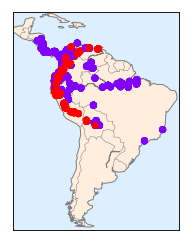

In [ ]:
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids
xgrid, ygrid = construct_grids(data)

# plot coastlines with Basemap
m = Basemap(projection='cyl', resolution='c', llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(), llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3, c=species, cmap='rainbow', latlon=True);

Unfortunately, this doesn't give a very good idea of the density of the species, because points in the species range may overlap one another. You may not realize it by looking at this plot, but there are over $1600$ points shown here!
Let's use kernel density estimation to show this distribution in a more interpretable way: as a smooth indication of density on the map. Because the coordinate system here lies on a spherical surface rather than a flat plane, we will use the haversine distance metric, which will correctly represent distances on a curved surface.

**Note**:
The *haversine formula* determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.

$$
d=2r\arcsin{\sqrt{\sin^2\left(\frac{\phi_2-\phi_1}{2}\right)+\cos{\phi_1}\cdot \cos{\phi_2}\cdot \sin^2\left(\frac{\lambda_2-\lambda_1}{2} \right)}},
$$

where 
* $d$ is the distance between the two points along a great circle of the sphere;
* $\phi$ -- latitude of point;
* $\lambda$ -- longitude of point.

The term haversine  is due to haversine $\text{hav}$ function that was used instead of $\sin$ in the formula.

$$
\text{hav}(x)=\sin^2\left(\frac{x}{2}\right).
$$

So if we rewrite the formula above using haversine it will read

$$
\text{hav}(\Theta)=\text{hav}(\phi_2-\phi_1)+\cos{\phi_1} \cdot \cos{\phi_2} \cdot \text{hav}(\lambda_2-\lambda_1),
$$

with $\Theta=\frac{d}{r}$ is central angle between any two points on a sphere.

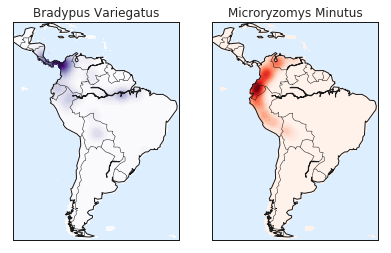

In [ ]:
# Set up the data grid for the contour plot
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
  axi.set_title(species_names[i])

  # plot coastlines with Basemap
  m = Basemap(projection='cyl', llcrnrlat=Y.min(), urcrnrlat=Y.max(), llcrnrlon=X.min(), urcrnrlon=X.max(), resolution='c', ax=axi)
  m.drawmapboundary(fill_color='#DDEEFF')
  m.drawcoastlines()
  m.drawcountries()
  
  # construct a spherical kernel density estimate of the distribution
  kde = KernelDensity(bandwidth=0.03, metric='haversine')
  kde.fit(np.radians(latlon[species == i]))

  # evaluate only on the land: -9999 indicates ocean
  Z = np.full(land_mask.shape[0], -9999.0)
  Z[land_mask] = np.exp(kde.score_samples(xy))
  Z = Z.reshape(X.shape)
  
  # plot contours of the density
  levels = np.linspace(0, Z.max(), 25)
  axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])  

Now we have a much clearer picture of the geographical distribution of observation of two species.



#Example: Fisher irises

Here is another example of nice visualization with the help of the `kdeplot` (convenient plot function with the built in kde algorithm in it) from `seaborn` package.

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_15_kernel_density_estimation/iris.png" width="650px" />

<br>


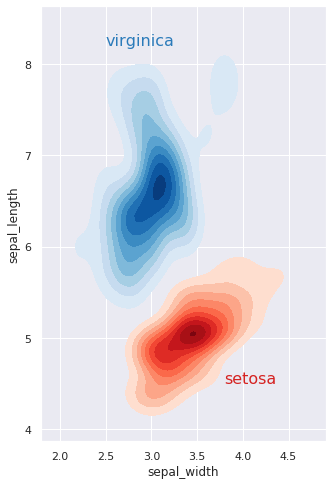

In [ ]:
#@title Irisis classes visualization with KDE
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue);
ax.text(3.8, 4.5, "setosa", size=16, color=red);

#Example: Not-So-Naive Bayes

For naive Bayes, the generative model is a simple axis-aligned Gaussian.
With a density estimation algorithm like KDE, we can remove the “naive” element and perform the same classification with a more sophisticated generative model for each class.
It's still Bayesian classification, but it's no longer naive.

1. Split the training data by label.
2. For each set, fit a KDE to obtain a generative model of the data.
This allows you for any observation x and label y to compute a likelihood $P(x|y)$.
3. From the number of examples of each class in the training set, compute the class prior, $P(y)$ .
4. For an unknown point x , the posterior probability for each class is $P(y|x)= P(x|y)P(y)$. The class that maximizes this posterior is the label assigned to the point.

Let's try this custom estimator on a problem we have seen before: the classification of handwritten digits. Here we will load the digits, and compute the cross-validation score for a range of candidate bandwidths using the `GridSearchCV` meta-estimator.

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

# BaseEstimator contains the logic necessary to clone/copy an estimator for use in a crossvalidation procedure
# ClassifierMixin defines a default score() method used by such routines
class KDEClassifier(BaseEstimator, ClassifierMixin):
  """Bayesian generative classification based on KDE
  Parameters
  ----------
  bandwidth : float
  the kernel bandwidth within each class
  kernel : str
  the kernel name, passed to KernelDensity
  """
  def __init__(self, bandwidth=1.0, kernel='gaussian'):
    self.bandwidth = bandwidth
    self.kernel = kernel
  
  # find the unique classes in the training data, 
  # train a KernelDensity model for each class, 
  # compute the class priors based on the number of input samples.
  def fit(self, X, y):
    self.classes_ = np.sort(np.unique(y))
    training_sets = [X[y == yi] for yi in self.classes_]
    self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi) for Xi in training_sets]
    self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
    return self # for chaining
  
  # predicting labels on new data
  def predict_proba(self, X):
    logprobs = np.array([model.score_samples(X) for model in self.models_]).T
    result = np.exp(logprobs + self.logpriors_)
    return result / result.sum(1, keepdims=True)
  
  def predict(self, X):
    return self.classes_[np.argmax(self.predict_proba(X), 1)]

We now use this class.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

digits = load_digits()
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {'bandwidth': bandwidths}, cv=3)
grid.fit(digits.data, digits.target)
scores = grid.cv_results_['mean_test_score']

{'bandwidth': 7.054802310718643}
accuracy = 0.9666110183639399


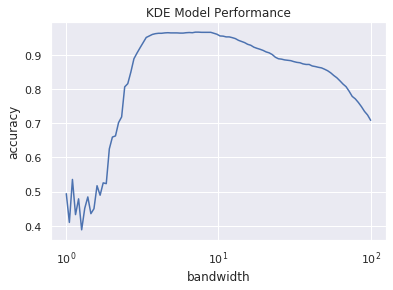

In [ ]:
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)

We see that this not-so-naive Bayesian classifier reaches a cross-validation accuracy of just over $96\%$; this is compared to around $80\%$ for the naive Bayesian classification:


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), digits.data, digits.target, cv=3).mean()

0.8186003803550138

One benefit of such a generative classifier is interpretability of results: for each unknown sample, we not only get a probabilistic classification, but a full model of the distribution of points we are comparing it to! If desired, this offers an intuitive window into the reasons for a particular classification that algorithms like SVMs and random forests tend to obscure.
If you would like to take this further, there are some improvements that could be made to our KDE classifier model:
* We could allow the bandwidth in each class to vary independently.
*  We could optimize these bandwidths not based on their prediction score, but on the likelihood of the training data under the generative model within each class (i.e., use the scores from KernelDensity itself rather than the global prediction accuracy).

#Conclusion

KDE is a non-parametric estimation technique that could be used for pdf estimation, data smoothing and interpolation. Basically it's a method to get continuous distribution given a set of discrete data points.

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_15_kernel_density_estimation/globe.jpg" width="450px" />

<br>

